# Scatter texts - General and Fake Covid Datasets

In this notebook we want to do a frequency comparison between different elements (emojis, hashtags, user mentions, words, bigrams, trigrams) in the two datasets. We have made the comparison possible by doing a min/max normalization on the dataframe.

**1 is the highest frequency, 0 is the lowest**.

To get the best Scatter Text we have used Vega and not Altair because Vega allows to avoid annoying and bad looking text overlaps between the points in the cart. 

# Scatter text Emojis

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index= 0
emos = []
for element in data:
    em = demoji.findall_list(data[index]['full_text'], False)
    for e in em:
        e = e + "  " + "fakecovid"
        emos.append(e)
    index= index+1

index1= 0
emos1 = []
for element in data1:
    em = demoji.findall_list(data1[index1]['full_text'], False)
    for e in em:
        e = e + "  " + "generalcovid"
        emos1.append(e)
    index1= index1+1

merged_final = emos + emos1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Emoji', 0:'Count'})

col_one_list = df['Emoji'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Emoji']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())

**At this point we're moving to Vega.** Vega requires the data in this format {"Emoji": "**emoji**", "General Covid": **value**, "Fake Covid": **value**}. We have used a workaround in order to get the data in that json format already indented, we have plotted the df_norm dataframe with altair, opened the source of the chart and copy pasted the needed data on vega editor. **We know this isn't the best solution, let us know if you have other ideas**

An example of the code we've used to get the json: (this code is the same for all the other sections)
```
a = alt.Chart(df_norm).mark_text().encode(
    x=alt.X('General Covid', scale=alt.Scale(type="log")),
    y=alt.Y('Fake Covid'), #, scale=alt.Scale(type="log") ????
).transform_filter(
    {"and": [alt.FieldGTPredicate(field='General Covid', gt=0), alt.FieldGTPredicate(field='Fake Covid', gt=0)]}
).properties(width=800,height=500)

a.show()
```

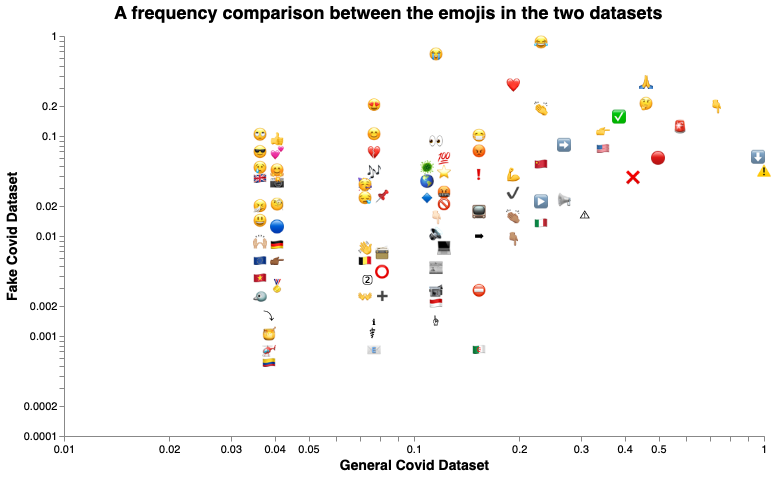

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042xG2EaCG0aJx9vNzZtWSRMJAhXaRA7WVlQsjQBGTcaWXo0AHYABiKZeBoyLDQAFhKZJAZMNggaAC84NGSkWSSYuLQAbVBxJAQO9DYGRQB9PpQZYiQAGxMIQdAAUQQAmk7AXg3ACr2kgHFTOEVl7QBhNmJctCLKAQKANgBOACYAZiLXz5+-jIAGJIADWvhudx6qEeAEYil83gUBAIvgJYS8ABywt7PD4AXykm22gU6gB4NwCXu2TAFe7JzOFyW11u9xhlARmOqL1hqI5XJ5nOqwLBEOZ0MeJQKuPhxS+XxeiNh1S+BUJxJ25KpgH-dunic6XSEsuH8vlfXnc01ZEAg8FMqEPNklLkYj6-KW-BFy1UgLbq9CAE3JAPB-Or1jINYsoOO+v3eUb+3w+QptYftH2RHKKSMxAjeX1TH1hKqJ3pJu3Qe0AgXvBhm2w1s02c81m42Cq3CmvhkpFJ0vF2S9Hu2UvL0+0noMmAUf2q-rRfb2Q3jY2BYmRXbWSUfgJsQikSi0RjMQSiyPSyAyYA0-aDMlOuurybX9ZNTYfLetK8Nw5LnUAMuRT0Mz1nVLGMYAsBsLLu2s6ykUqYCB8Hw5s8koHh+vogHsgDiO7+EGsgUIH-NG+EFOBd5wi87wFB81QFMULyAS6h5qqOICACjkl4gNeIbYXChHAQR8bEf+4obluiLIqi6JYihTGAKrUWEkWycZ4UBOYCau4pFIB2JfNUKIvM81T-AIUknmSgDnu2SgB3u3Jgl1k+dlLq2SaCcZ+yAJI7ZKAH-71lqbZ84PoutGqbWJQohpm4FNy2byj8XwuWWgBAe95tbKSlAKYkF0KwnFICAODUbEcbeNlvI+flmi8GWzuibyYtRLxprUmZDken5loA9TtJeGsIBd1qJvBVa6bvCom7hJyHNaheyAOx7HX2j1-k8par5cWymJYgIRTcvBRRVTVmLZXsgAye2SgA-+zN972SVgWOW+HZFFmPbvF1XyKtVVHZWSgBfu2SgAfu2djzaZdPX9eKHK1HK5GUdRXZGeNTEYWSgDf+39EZzU+fXXctG3Ucq67bSJSLVPtgDLu8jc6A82wMOrhiLVAZAjVLCHygxp+2AEc7yMfLxil8ZTG24hFq300qgHrci+3oWSgC-+8jkZKXLCYY-JEpujKcoKkqhaMSZ5m0le9LTj5fFywRXy89t606TVkXFVBsWwyeeyAKy7pPza7vIvm2SuM-GDPZtBipdrh+2ucjAOo-OvO4gzTO0wiZFIh8MNa+SgAXu2SgAvuy7F0BR7TmG46XU9q6-aq01ydjoAr7tkoAf7tZ6V9dXUtSsF86xfSh6ZfFqhZlkoAn7t1+Tz7A+91I-TLPET-xis2Rtrd9u3g6Iu9Fl9xzxvcwU6XT4bm1vNtOI1a89Xvb3ZKAN+7A-h43nvOfb5Jn2SgDPu5fC4U9vwVxxDVE0XR0Ej59L83YOSbjPc2YUrYohtjFfagAvnZlq-N2i0b4705JvTEbw94HgEFiTEd19qAG6dmWV9zToxAfnambxaZR0ZszQmd8yyAG+d0mG8ubvFNu-W6dVUwHhqg2bGmsu5MUAHwbgB0XcARdXON1Zy01opiZ6uDNKwm0vTbKgBOQmYawie7CyEf29rmX2e98y1C4ftQA8nvIwbj1cqHCUxvALEqLqnwyJgM7seToQjAAFu0QhBaNebfy7L-WEcjqirVTPtQAULveKASaUhyDgp6MotyQxAc6p23LmhQA5zsaMnnhbRcTbpdkLr2FWHd9qAAedqJ2depm1CpbCKkDooImyoAQvJ8r6z-D5TmOSeY2LXGtDasE947WogItxZZACfO5Uyx1TenqUogKORQSNJMyUbTbKgBWSnEQ3SRmMNrBNCRaXMXUNrvUANv7bSbwG2CtEnOZtClzxKYOd6gBr3bJIAd92tmXR2c3e6XSnovQ5KMlqp5AA3u2ZT5tzZl1heHdbBfylEAroek95AC9aXI6dcqpQ8oUtyLvPAccokWCIdoAFl3kZILzsFUWtFYLZhzJiORkp3pp2fmizi8lUpG1+FvHRHZY7gwTv42ilFsqAAKyC57L-xgRxdSnSicMGmkZW8bKgBQclDli92lMlF3VWlmAZW1YLZUAArUUzB6xMpXylZyjsH6UMvtQAAjumrmuaqRa56oZk3tmXMFECzZUALhkTqEEut2Qkgx-tjEURafAm5C1eZFLbgS+Uyr6EgFFaHLlG8iI4pSRRTeTMCh8ILdlQAK2TRo1RS11cyZEhPkcsrSayU1CMACi7FjB5Nmsby2anqcx5gLIzHkWUU2AFTybJnK-h5ItbOaC1bFkKKtQ29JgAocilhCt+na1wIjxkNHc4l9wMWJW5FdbLCqGxYVos2ijrV6QLXalNexAC0e4G12wb5IoiilBGCcEcyuOBUIwAC7uruxeu8ULognaQOVmI5g70mAAfiJ9vicVgLqdbRpaSD1lkAGS7gHNWIfuXix5noU2AEkCCVJ7MXTKA-k2c26xJ7ixDiPE+1AAzO6O9ebDebzNkbWy9nJsqAHVyMtFGsy83Az2Q5+Z4QZn3WMtCgAFHdYxm9jiHOM1qWTxolMm9iABEdhTZ6J2VodMJGjI093vSroAB93sPAKoxu2p4UUO23eoATP3SNXI7DGyjk6N0CookK3+0ngV7EAER7Vnr5efFH5uCezRNhJTYANtJXMYvDGOrmPKbPiiCcVadCzuNoc04ALL3QvfNAXh4pJdSl3sABU7RWzZgZCWJyDEmTl3sABY7unNH6d2Tx3StrvhJ3QyAQAqWSJcxme5SnXm6hqSeGwOAXu6AFh9+DfkX0zzqxB1ETXoMDaEYAcl2avZv5kEvStNtKJ1+P1mTZJACn+-t4DDo7EFuepGZxoULvAvWSNpWHmcN3dniUB7Djnswp-d3R+GdbvpYdGthrG3jlbc04AY93Psz2+9Z8LVMCNJsVMqbKgAGBmR6ezR43h53sAKW7BPyNtrR5W-agATHYh+jkKFt7MNMcym1RFOOxjdyWbFTs662rI04FwAwHsM4MxtCN3D82FqFxNQAsjti8xnYhFBlAUZhCc19JexADvO4rr26CYV89y-tQA1XtLZiRx6L9XviNa6vtQAZDt69AUbtT87Zdw0ACk77Xz04vxaXdWOPG2AGdd73xOcXcfnT1gtIOmJkkAJH7oeecypwb8WUlC6YMzy4FwA8HtO8NmiKitRSvF32oANx288f26zam9fX-4p0TybWrcF9HTaMbN-agAanYr7dOzED33QLvYAYR3u9Tpd3O+t7uHYI5H2uM7rw5V0sVaabKQjAAru4jGf6li9+4q1rwAEnub7ZFF6HNvYdzbhoAKT3D+4rKwvQl+1ACSe9f1PNMM80NjpP-YgB5HZOtfgsuFihN1Bptwi1G1AAaXfNxIQ40ehV1emKEoT2jvUAEed5-bsW-RNT-MsQAKp3x4Ut-gFZfsYtxNjkpN9pABpPYb3HQvUj2rwMlrzvUAGkdygpTX7F-dPahGOWoTA08KuXWdidpTGVHMLcXbLLjV3Cfd6QAe33n8ps-Y28TEU1ABiMk50gg1Wp12TQITVLm4MsneWf173qX7yaUbUAHLdzfZeJ+P-fhXGYA0SbgvYQAKD3mCVIcV0F4IyI5RYUHo7F9pABCPcEzbQrUxnrSjzoILyBQmkAAI96-OfGleVelORRA5FQAA-3n8KEqF6Z38uD9pABAXef1+RgOelVzejvVMQ32PTc1UKE3UKVhy3ENWTfX2kAA+d6-ReOxDWH4BlNafaQAWD3nCJsbICxIYf5j85E3tu5AAV-efyr2vTCPGLhkABGd5-bfTHfaL-NeRTQiNLdHJJRpT9eCNEJIgbeGU6CopLKoqnYQzGYzXdejfmc-B2QAfJ3+izYjMQCTMsQHj9hABaveWM0J3yeRTTJEAEJ9lQ86aoq4ybfZGHKDTXY4wAGR3r8Gpu1vV8wIpE5so4tICZlWCCjlcii4D9o5dyj+D0VBC1DITVsHlys2jmVUVSTJVCdukqDEMT9iD4R4dAtABUnevy4TzV4S5H4RX0AEJdpE2lBVBlZUT4DSZNLXQAKj2XicUfZW8c1UwIjhFAASXb-0kwByeycWB32kABw9xU37TmeCYqShTLQ3WmdUh2QAOD3eS0EME7pE4U9QDkUV4KRsTERecZ0I8JC71AA0ncdKlwFP-0D3SQADq0i08Mjo5aEV9ABjXb+PjQBMI2RUADb9k0yHBEXCHVfpXebaNYo9BksjTqZk4CAgnMho2gwyQvd6QAOH3vSVt88RZowF8JSjjNMGCyRAB--ezMZw2mb0STkNVJX0ADxd7U-DGktWWUgbD4QAY4IByRCfNhiAkosvj0AXglyzjySITit85ZDklJcV9ABaXZiIQmomqgxHRGVC5BjwdkAG5d6Ytw4qeUGFPE-aQAGV3zC70W1dyvsKSDyP43jhpbixotcsCSSCpKjwTLjgLbo0yscNZ3pABp-egoEMAv3JJy10AEYd5-XUxxTmGFV7faQANh2Yird1soNsovgdzSzYLxRudG9WToTT9YTOSJpABOXebI4xb1HMl2on2kAHMd5-MfAXbSew0vEsmC84uCq+BCqdI8mbBQ5FMHEFa-PVQs4ZV4Ls4FH6SwgClHICnCgbGkMkDSoy-PEyxDUCndOjCCsy0+VlBiuSoSGy4Dd6QAJ92yRAAz3d-K10AEEdsE9y7C3Df41YxtQAE93n87LaNRpNyQBAABMhCt8ngpqWZz7ygWMK10AEOdmQ4csNeQyNRtLDKy4KZilk1g1cyLeibKQAITJUrNiw9WCDCHMB8tdABKPeXMxnWm0oPlqleGylhHotkr3PSsQzatZw6oG0ADMyAq5UgS9vIEnywAX939DMrDDsqs8JoJZ+zyr3MPKcyqKYTNt3pAAX-YWv4uPOWq10ABE9w-HU+xPU4i7aB89xQAH92-9ODP5BUoZbT9hABwPZiNVP5OjwLHevQCEUAHpdmI9k-7Z6pRbKQABrImqhDFLvMt13jwLEq9hABMnb+l5iwTdNjLpnmIdkABydwm1w06kgh7cm-YOBA6h4Uyy7QAGv3qbcS4VCjEUAaywjovJmaYQ40nrHsiLnFIbTxAB8-c5uOrZNtw5OLOliFtKFmX2kAGI92WxnG4hyhjEq9JZtLWmnRtQAdl2TpABYAhSqNuuJ+pqv+v2l1xVtZsC0AFA962pWKGYVUDNi+wwAQD33aZ5BrNxkSswe0+a0JABIPYDsNiFlO1lXFNxH2kAFKd6O4KDshIqUl0AyfaFAp2tWu9RKPOzyu9QAMp3U6+UPVQ7US+0MSgTABmffLqnQipnNon2kACIdxujdcS9TRszuooFfQAGN2+6HQViW73pAAmfeHvXHjl809v83ekAEH9qek69is6u9Jwou9LbKQMPu7KQANLJl7u63d9p1rN7ByZjes0R3ovpfoz7jaDbb7XKuIMrwEtrUN9pABLHalnNuG2XuUuKsSthADFGswsEjNkzC9V7XRJ5GyheGAb-rYvhs4rhkACJd5euKj4xymTAQeBu+rrGg2Y29dJAoXBp+kiX0uo8fQXbKD4Uhsa8hxDZuu-VulNL4Oh0BtSagkI2s+g9Jaodhskhh6qrGsChy3G7qvBkiFfQARF3l7CKgcwEGayxAAMPansoYkp0hRGykABhyTyZephjAlfQAYl3h60RCG+tC9HQV9AA6XantiPTqXz0tQiEUAAddqe18jwj87mnwu9PoyR2+LXQAYJ2p7wzAC4ruChFABXXZCdtpnrXPDsOinszo0g8ffNhXFl3pTRNX8bUn2kACRd9BkR+yhK-aR9HJ98FNZdJGcp26C+mvK+lNP0KejBd4BmA3UQkJMxTJrXBXGph4FfDDRGS2kKuNK9S++md044wAFD2p7c0eFwahTSrPJhnl6QlPg3zPDPy713JlayGwH86tcxE+m1xFQ6oGVnTiaGU8EU08punjiQtjn+671AAqXcKdsOKdMzvUACwd5e0e5h-aHAx5-aQAUl3h7KICHxmV89sgW71HUYWtcmD4XjjAAKHfQbidqr-iDLuc00AEY9qe8ZyxvDFfQACl2QnoHTQ4IewWnKF3pABWfcPr9PqMks-owsEf2dYKPoDMgr0ceYxxboD3DsAC4yEZpU66lS3NBJwASJ2QnRbAd9SuwV9ABGXZ5b2c4fCtTMioNsVd+YMdLjpJcvofZa3qBMAFv9nVjVse02i2xqhl9Rnuu9QABp27GqWLS2mst5lw61UkWCtsX9LAAIfaSet3htILvRJm9cC0ABidkJsZ+piZqS31iadyU41Vw0cBxGhR0ioE0eR+w1tV4ug2wAL13h6Cx1zvaYsInABh3fNepP+aBMAHZ9kJw7QWE7NssWRtZM8N5xwAPV2-7CqVSTyU1AAKcmLervJYPE5h2tj0ACd96t6c2tg2wAcd3Z30C9XG1ABVXbefxnis+a10AFmd6NzR8x8I+wwAaZ2EGiCFa4SZNABesjJf7QpbNOpYia1M7bhmiNfdJQTbhn8I-c6G0ZCext1vuP2kACkdmVhGsWhRyWoRQAN120Wv456Nz9ojhf2yxABVHd7cWputUrMsAE-989oNy95Bh2QAKB3MOxWAGV9AAt3fI5HOw-1oG0AAIyEV1g+R+VzNrXEOVDtCMo6plNsUZ2iaQAAJ38WSbX9qFJ2TJABFfZieZjtuKAScAE8d8DjMdN+VyWvYQAPx3aOiqxy71AB2Hf0YteYfsMAGyd-F9shOpfJlFNQAHgIWOcz-d2jlROiap3oE9uO9hiTk3c3U3EMIGw60T72nHhFABQ3aM5rcMaBPOS-YdjKMFv45ZvD3FpIs2t9TvUABg9pJlLpDezBJ9qTzwAUj27HsErn0i38dCszPPABqnZCaWr5Pmck-cVFO47JEAA59ux5EL9NEK87EPSbkMzMkQAW93N2daSmgTAB-fdWYhdjfekAB19gj6iterXCWHzjhvz-Nsy9CyWc2m13lzsXV3fbbADVrobvQ-bm-LQo7zTQABj2ZW53E0l471AB0nbUY4Lk5nqa7LGEpkvW4E9Yovdh0VrvUAEUdpJ2c7HPMrorMfaQATj27Hg3CKvu0IHrWvAApfeXrxP+WKIScAEE9iLh77Q96M7yzC7gL0d4L96QABH2CeV2O57DETuOhFABo3YA9EdGj1txsAHw921sQqh5lu9QADp2QnBL5mZd9p68Lu-nE19pAB73eXau8BPSQEyZ5Nt24c+1sQaI-2kAG49mJrD8V5HskQAKf2hm9vEvhb1XIvV3kVAAl-YV6QvekABn91lxkjb466Xm3sywACP25G1PXqOPjj1juPAA6Mg15EM5eocbUABddtRqzyUyULOuczTD+n+8P3ZDBnG-aXPTzwAZj33G9ajtY6RYBm+z1fFvabgetci2Lu6m5jmjYv9gyjdnfP-vTT474jHH-VXeyykuOXGX+eF1tsjmLfVbNvNNRduPAARcnT69mt47ie+RSmM8+NNa58sl9H9qy16B6vf0sAED9kJ9p7u5HvYQAUZ3pvuGj2lG0IWNPPAmVXW+++5a+36uGPNNAAnneXqmqMJP8IU88AGo9zrrBAOKIRry-Xa-nsEAAZO-dzp60k70gACD24+WVPYl1wgGABRHf0ZzNpcgpAAqXw8jl99uWRX6rPQU7vRAArft2MV67JFfLDSZ6AB13YIGb8rehPa7oFkAB5O3e0TgPsXWrTd6GDkACPuxfxrJX99oXuVroADz92fqAn-p6dkUgAcv3KB8tIHivkACbu9aykH5xPerA7uIABL95euV3e4f59ogAMD21GdrSPNwUAAgZBoI-iR8BeWuQACR7CPS9qpzFon9AADLs6d+2t1Y4oAFE95Zub0f6W9hG7zbdp8RXyAA93Yd6atjiB+VroADV96IZa2RTfQLKvPVTIP3sJX4meIeTzoAC49r-ml2mo5VjigAYT21G8BDXEeVL47craF3JCgKx0a-c2WebY6vJ1LaYstcgAej2hBMbevnekACoe4oO340UU0gAIHIbBt0TPmI32iABUHdG6AdxuBtQAJS7ajSupAx9TQNsogAUzI1G-OC+pLXFSN90AgACHJJh1GUXtgP-z2FAAQnvOCd+rghxEb0AAg+14Nf6JUyQgAPH2ReZzdBJgldJXMQuDsEDj30YpxoX+9HE-oADmdt4fR1xqAAznd6GHtIWd6QAGi7SQ+dscQlgt8-uT-cLNlEXRksACNhLdvYUADYe-oNJqGDsid6QAFk7+LAakfGDqV0NO2rC7t-22pmJf8+3R9q6ytLZZw6Qic8q10AAs+5gNDILNcBKaQAM9k6Q-YcfTvSAAEHcpHidMiP1bgoAGhyQoa-XaolDLs51QAALbwlA0YACMdg0YAGcdg0YAGMdg0YABcdg0YAH8dpEaESIbbZTIFfVenDn2iAB0vdhHitcagAKL2MRMvO9IAGe9j0Ug2yiAAJsgjHa9TaKzQgf1zvKnMnSPjZFIAAH9hYezx3bHFAAILviiwahaCMgNlaTHC0IPJJnmgx5GldcEBgzIvYUABIe9lwzZpcEmgAAD3A29jePkCPcSABD3cbbPAi+LbOfNf0ACAZOcK7oD8NG3BbYROPFA8DLSR-GRPtCOh8cghY-Y6g0Oc4JMoKa43EcEONbIo04-lQgSMOW7HEHSnnM3Nx0AAAZHOLZA10eQlLc0rwLvSABoPbsa8jWm-IyiBAPhKgi3KZsQ7oOHsKAAOXbq4GpGRdUYOvtEAA0e0k3RaIc6qd6QKvrwo45pkeQiQALC7lArcYqG4KAAsYj9GUcgSgAb32YBivWckSQAnP0DmxxQACE7co-0lHy1yAABveImyDtsgANd2ExTA1gloKV5mVAAE-u09KJLDA2oAH3dlTmx1eoadAAqbtyMUSUDSnnekAByO4pKrrKSuBPY9AIAAwye8dPQQ4jFkJHpQynxMPEDZAAl2QGTLujvO9IAHK94MV700yksLuSgjiivkAAHu7GJ37Ed9gLWc2nsAgJuSIR-o-aIAGSdurnCLBon9AAIHucCnxX4mlqVUYHrjRmyI2NvWSBKABS-cP7uspxSofaIAEqdokTjCAKkiV8gALF2sxHzcIXenv57iWh7vQcg1yuGLMtcgABD3PxC4t1taWv5CIza+AwIfuI3GDk6x8ZIwUCTBTuime45GiUIzaFFMwhWDQLHkVV5DM6h5k7WpcLDLUQdCgAOX2OJA7LXL4NSkjSKGfPacftEABwO6s1SabNvG70WXmSArh+9IO7HdaNfzJDmZzuW0kQms3cJpMtmWuQALU7BYsXjgOLGaZAAvHvOieGDTdJDlA0kbCgu2k-aP+P2p-SQ0Z4r0XeigqYy0prJUKSRINqABMXbunrNPGXhLpPtEAAve05O0FwxAAYjvgy2pUo5FIACh9w-oDw8lAlAA2fsMzBJl2JzKzN2nsyzKgAHv2KZgMh6d4RXwFMLuwE+-HemmiedAAXLuizJRUMwLDpk87D5uO81VroAE59pJlD11R9VBkRZFNNGVa6AAxfZCZJjXgKY85mmLMqAAlfZqnLTcagAEt3ZmC-bca50FGAABXbZ61TsQwHO9IAD2duGSIJTSAAqwhskyDjpxxJ-K11PhfULudgofpph-xrcmpbfCyZpiOh5y3eBc-EXekAD0O57MwYfDXkHyTzhRU86AA+HfuGwlHhz0I3oACH9wWemW2yDNjoZ0-OXiJEJKzxJxxQAIU7Ko9gmqITJAlfK9JQmawTwkoUgSX0SyljObjTClhxxMgs0NLnDyQ0xMziTJmGlDyDx5cg2oAEdd+Dn9WMmdDji1WTzsDVa6ABh-e-qbTF5HvUee9DBS1wpe38xtF4m45YlWuD8A1udLomXZAAY-si9ZshYnAToUACo+0dJ8EyYhEgADF3uRG8krAAq1yAAJnanlxkiB9hH-I1P3nnzxcl0mYvtEACIe63Kaztykad6QAKx70sjZl4zlkppAAsOTVys+KaQAPpkPk3mQbRiqecv6O3IRIAEbdlBThxkzaMDJj47gS+OSnpJAAqGSEK386o7KIAEKyehXTURpG9AA1ftCLzxl2UeOvM-kXyzKgADv3RJSFHQotla6AAafZMW4ytcX9BGIFL-7YLDyR85OWgrmk4iz5o0kQu5NMWBZAALHuhzlpnPfaIADo9mOSiNMn9xWugAfH29FsrDuftEADHO7J35SITSBd6dmEz1eY8iCp86DTqTlcVV9jigAaJ2KJW4lfIAEDdmRW-0CyABYHbsWY57CgAAB3Els3IEoADD91pYlSET9zeJlikQsvO1kTRAATHtsKqZwM7bOgoaWY5F+A2QAMlkIyzvGWKESABmXYf4QL+JuCgbIADRyGyQDPYXUz3g+0YKmWNLSediSCXSZdjJ5nhKJogAS52e5ktMkIADv97Zds3mlGtByMkl7J9Oyg-huOrEXZYABDd5GYF0UU6SQAQiQANS7mPbxtj0JJ3pd5A8j+Ucuf4G8SZxxQAL87-S-ocikADq+zfJIEdDRlgAS12mJTLbOb+knJM9AAKbvVLd+E0HCW5Jxk1LNMgAXD2D2LoixpM00yAABPcZWZD9ogATB3vl+0QAOq7Uqq6SmjTTcdmkuys2r2UHnkKQlrywjr5IJGHLglF0jISqq1yiVPOgACR20JdHQ3vtEABAO5yr8llhAA4bs2SBJvcmTIAByyGyVnO4KAB5sg9UnLNMgAdD3tRyGYoSf3pytcV49cnxRU2RSAAsfa6Ut17CgAZD3olmDWJXekADuu8qvtYG1AA+bsArkUgAXX3nV+0QAHh73Mg1cIoGx70-V5SrlscUAC4OxoupEswU0gAY3J4VFPNGXelsaKysBYsmZXDAlhkLe+FCriCvkAABu-KrvSAASvYXXpJAA8OQFqFRWuQAIE7vCmYSlLxUmrGGxnKLlrkABtexGpZw-93oqRTzoAGy90tWZUACH+-oLWXbj3ogAHn2IJQyKCcfDvSO5uOukldWZUABc+yV0s6d9JSSKskIAE19oDWgsAD2u5WpTSABOMgUVjtnxT7Uvp4tPm6q407wmKe9EADc+xkog5PD9ogAXZ2+1WkmBqG0Tl8quVcMQAEu7cG39K6ovXIC2cyKQAGf7LG5xhnITVigV8gAQV3eNseQAPP7omkyIAEX9yTeSEAB9+7JrLCABVnaQ0G1AAWruqa-BEy-FYOTCVuLjigAJR3FNp4QAOL7D6y7IAFr96lWuS9r3zNMkSTzkjjLF7BAArTvsa36nG44oAHsd8zb+jNrYabJWPWAoCneiAABfdKlhMlp9hQAFs7HameZNK1yAA1nfc26iT+gAHh2yVrozTIAC4dhZUDMel3pAArDu+bnGgAKN3d128zTIAHIdjdS2s0yAAbvZK2x404Xpf+ceucmBYFSnnI6EEtw2IZxpxClfIAAHdzTTJi4U2TQVqXK2VrkABIO6NsCyABxPZ1VTq9Vk2PxagsCzOxWugATN2mtDsQAGx7msosYKMAAJu8Zr2DlbeVby-TTJkAAoZClqjXvRAAWbt7a-2WCl5ZvKWk1yV8wUgTf0yBKAAYffm0TRAAWHuZbeGA2QAHLk1mjFrjUABjOxVpzEyYAAlampM4r5AALbvnbAAFHsw6kJdm4FIAGVyI7ZDISbwbE5622RYFjknGq+t-fcwXVsCz-jetK2rftdv5XApAAVaS4TX1+E7KERlq0sSzKgANn28dd8wBiA0PXj9gUi5MsXRV2WDMduOG1nf5yUmbCVJWuQAC172mqXW0IKW0rsoN4tHSeoGyyRPObWJnoACbd87Sdop2Erj5wKQAH1kr2scIAGt9l3cisAAIu3Fomk0itcqk2nSrpCFbtvtd6QAEF7gu+wdtkACoux7r2CAAkneM1khAA4-se6yQgASf249gAML2Pdg2N6XKwD7grG0gARV3EddUg2oAFxdrNeBRzVa5AAIDuR7mVE0QAFQ7cewAJQ752qCizrBGIY6+WWrnQZJm5zFOmd6QAGJ7L6-lm+rvSABynfB0IyzKgAYH3G9ETQAEy7QK1obpvo0uq0IgAWJ249PFbjoAGrSGye0Ns0fDAAlfvA6mIgAG+Iy9K01CAlmc2AAkveX37RAAiXti6Ddd6QAKd7xmwAESETahnULs0yyMQp9u-xYFm93siihV6q1rUJsmtTR1CTQAD4772nTSIU9UadAAODvna9qzm0rcGva2MyTIgAeH279uNQALk7c+-qYAHxdvLbLJpkppdGk6nvawT70Q6xte8oPQSvQkQHUIyhXZYAGldpPVSFJ5-aN00yhJoAAgd6g-tEABRO-QY4WMGtcZ2sA7wY20TRwFuuzfezoY0OxAAPHse7AAX8Rx7AADDurLJ970QALb7r+lNIAG8yC5fdKUM3KgSgAKv249bjNrfPyFm-o19Jc7g7psp1tLUImyVroACT94zW8AEZ06eDdqolZpkABvOx7sADphAgaIMgT3ogAMv2k9moPyrIbgPLbWDm43nSvORSAAvfYe2wGtcrK8Q+pAG1aKU0H2ZzdPla6AAM3dtW6cI0mEwAMi7E+5ho0LvSAB1nav0mRAAjPtUb1dA62DLssACJuyMfJCjwN+H2gJgNmXQEz0DuyTAxYVa21H9ogAfh3jNA02w8ikABR+x0e8GpJ9oiG-blcqC3PR9o+FVroADr98g+9Clp271DVOiaIAG4d-Iz0y4NFHByp++enekADhO4UcAlEzwDGhuGIAHAd14ymkADXxOdsACZe3HsAB4O8ceOKAAlvY90jomegAIV2SdoTfaIAHwd+Y2OCpB8FljuTIEoaONFmjAApjsGjAAdjtGjHRih65cn1-SABt3bL7K7ATGBkNYtqxOXZAA-PsTHUZNGrXIADMd9fc1KFPpGvVgWFrEMykVx7AAKDse6hEgAX13tTpMtA9oYj7NrgDTOw0zEaBP66z9+0QAMU7sCxA5KPsL9i1DcRh3d3EACI+wia1xwcXTnRmEyZEAA2+6Kf0rnVzazHT-dacbQSSddFp0JUEdxqoHu9kJ1gknP9PkhAAAfucmllmmLdYHsFP6qluN2-SoAFB9v42ZUADv+16YGyCtjdRPO9IAD494M93EACu+xSZACAAwahskcj36d6QAGh7ZZsxQvI2NSMgSgAZ32mzcMQAJw7EZkEwbXRGKylTY8zTIACKdqs2gsABwu8SfanHEq9F3LeUjsCyABsXYnMmRUKhB7w8qe7gvyYzAR-6UPv70TRAAHjsnnyQgANf22zZIQAJf7cej6GnsAC++wOcCyAB2nbbOAA4MnO2AA5PflNlzFTF5jTlBaTO0Tjli5-aFBf8P5nm4Wxu9IAFk9vspBbzPJmv5KFu9IAAC9kjYwswmABk3fO2ABKvdrP093obyIc0aZnVAlzI8amkx-AdPHbsogAXHJADVCzdQNkACE5OeZYE+HUIgAKrIXzZYZ9b6YuPBHY8gAcn2xLsAy80xA1Hmnbzh86E18bhg070LhFwclheRT8DmLsZzY8KYmi7z4DMltCKPvfmqWxJ70eeRxeHOgJ2D8+mTIABSyE-V9r4XIpLqnnQAAd7bZvYIAGadsK15ohNIWiLcFlfIAB5dtc4FkABTO-qYIuxXjLVluGIAGQd4zd2psn1HZ5WuQAAk7eSsGProSaAAivY-OAARfZnNIcgSwuj466b4Ox5AAIfvam5pzy9y-nH3Pl7jigAWh27LZIQADj7xm6oJLosuYXsrJ4QAKDUxmwABZkHuwACmE52ipJ5wLbQWD5zcf1eLAysLTtacF9ZWgsADiu8lYmhf0B5QiQAA2752wACl7H5wAKT7hxwABq7I1wAO77PuwbSmkABXZNqcABSu3Hq3UxXDrsF8S+pYdiAA4nbssc5nNgAcj2LrTEP-Q1ZMnHFAAyjtp6bsrXCzM5ovjyX3h2UQAA3ktawsxzu7iABKfact2StcwhrwxDZ+WABr-eM2ABn4g-PqVnNAUskOOYJtwjP65tbm9qfXwsGjL99MyoAFn987Witr73mOD+lQAKr7aewAMr7SNp8s5sAC8u4BYmjkzebYUu9Ewk86AB+vdRsE7UIgARDJVb5IQAH77Hu3RusZYtrbdLilk8MxEqOcigSgAIP2+jj3KfVrkABle3HqySedTp9VQ44NJvMYXQEwJxq8iirg5terH8EywNkACLZOdsACJO22aERbbajI9Wa+4kACnu+dsAAqO+dsAA9O3Zb2CAB9Hbj2AAInfO1WqtLkdzQXnahqABO3f5PU2YhMmX+q1xczOa9jnd5IccVL3021LGnQAKC752wALG7H5wABX7btns8ikACF+2np1hliyQgACn2WrfpvSyZFfNpG4LOhVIdSYTuIUqR8Wv3ccUABCO2FZTiD3MRl2BSaPectAlnpXlYzX6gPsM37Cv2zi7dD03k24YqfMkIAGT9w44AA897UxYtPuj4TTUetBSfYdtR2rTs5gbIAAMybewpcSokZdl0ZgU6LYLOV89D+wU9RHYIdQldD2+skG-IC3nb7+iFsG-g0v5JLVjAJ8hyscuxUhM4ut+I74ZNujLMFPVpB4eS30r5AA2rtx7AADjtx6linnXM0rvvshj0kgATLJMHhNoEqfBG48O3TseHyn-JzslA9rK1cHNo7asmR55iD6a87jgdN7Y8P0rRwY6HJO3a5lkdmy9LT1mWxDf9pSqI6BKABRfcttjhAA8vtJ7AAgvsV2A9DD4FeDbHvvQwHV2ute8qYgCApr2lma8RfSRFBUnTdxOy3ZAABpWugABn249gAAF209gAbH249lYTzoAC0d4zYAHSmTO1xPUHnaf8Qjqx+QhKNjqHYgARd2k9gAPX2szBWrXIABIdsK0zLYeZX-pThrk-tB7LtO0n0g+M-tFPXf18HUzwh56MAcnhbOQzzhVrkACkO1rbhiAA2nfO3iKBbPNxx6md3v7AJnItjZ+k-itAlAAuPtx7VnQ0xRx1ucYHKonG+0Jb461wsnQb0TnS58edv7AWT216dU84Zv829g3i7xxugAfEOywFBTzgHsMuPPpBgL7bIADTduPYAAudhe55s0xA29zKDmOwNmR1fPiDnQQAJDkajvm42lbu7dDjgAUV3zt7ke2x04-hFWEtxxQAMC7cewAJA7aeleIADfdj84AGh9sK-+V2NAkwc3DhV0eOG5uPtQpjtM2OFPhuXhHXFkdVrISY-4eXiz-OJNsUYr5AAcrvnbiVJ+yl2jcuyABPfYrswdaXEl4RIAB1duPRI+fs03jim53113f0qABn-bj2ABivcOP43HH-V+-bHjfmfPDja+v5wqcssZOzKye6F6tpwVpvNMgAXx209gAO32k9xvEF-89TfPPkUgAKn3jNgAX7I49gABL2PzpyNPYABN97U4AGVdka4ABV9tPYAAt9pPYAEt9zO4ABNdsK6qc8VBTztgAax3pJ-vCWivkAB9u4E+RVlUVXA2A9by8E0ppAAj8RhWHLtDwN0PZkztm49Dd5NzBbBetWtXIAQAB-EhxslJq9udlhAAXTvnbY+j7iF2WEZNp7AAMfvGbAAo2TnbAA3jthWnRmcmx-YUABeO2FcAAbO+dsACbO8ZsAB-pGntBLr204VkD94lUxDZP2Hvi5xyfFXiHuH7gWQAMF7hxwAEW72pwACK7Sen6a9Kw-vRAA9fvLvAA1WT0WMjKaQAGnk6K7wpipC1AkJXeRhJ2TdRdyYyxgAAdI3XkN9xCoNLcpvYXsTu9IAEW945w7FyHXPcXmmQAKc7hxzBee52vZuK3ZlHyloc3c+PKH70QAD77ce3eQ88YeKeX7yKQABf752wAAY7SewAJ372p55GFdT6TviPSj44oAAGd87T2SxcOelnBHoEoAGF972050h7vRzIDjpF1vjycWUaQSe+eRq8cdJ3LsP0-jal9zs5v9KqQk8dG-8t7rTL4KQL989jxgpdX5n5F1p-0pMXlXRXwxxB+8qUgsvZIQQbV7pdjhzI5Xjr7ZKDfdw04OX0b3l-0o+UvHMDjdDN+7hVx9HqXwbiN4W9peSv3cVIVG+m95OhEgAWd28p1pO1ifwCl7B-PwlQKTKbU-+TAp-nmUzd-4f7QLvV3wKZaujf2vTbQDh7x9+e8y3mHAy9xX972BPewfL3u9P5-e97BPvo36Ow65VOBSLv13iHxS6Mlf6tcF3i7+D9u8ieiH2+vYNj-++w+PzrCgb+65MiABpfch95VdlNBxu3h9yfbemIgAPzI7LQiQAEe7HPwAOm7SewAAT7520ffJ4veOe-XmmQAN17xm0C12ZgPu2sfgUl-RT5k9lhninnQAE17xms2xNrV1Snl8QJQAMH7SeleJY9NeV5ZbXlwLPI7IfYv8P4L3Gg3fs+gvPtoQ0PekjQfna2NyvyWppYWc5OCkeTvYNJQM8wuOHv6Vu8ZsABEZNJ406ABZvfO3SUnfZbsX+N7hjSUIvzvqL-b9e9p9l3ewQAAc7H9xn7b+Z-GfLsX0d+-j62diehEVHA65n+bss+TIgATH2tz4szTIAEWd7UxhktqHHAAkbvnbAAaDuHHAANrvanAAo7uHHAAZruHHAAI7vGbAASWRx6p7Mf-aFtb99M--7LX7uIAA39pPYAFp9tPWtV2WAAN3Zt+RfG-Zf-SoAA99u72WEADwO2FcAD8e8ZsAASZEnsAC7+2FcAAwu9qca9m+A-Jv32BAAJZ3ztcdwFt57b332hczXFVX8wTc-wb9S-OFyBIfpU3398p0JbyYhAAL7I2zQAFeyc7UAAqvfO0yCEX0M8RHSz2xUEA5PxxcKAg2kAAvPbCtAAfp27-NCEABiHZYDqHZZg3cAAjAPS9JwbjkAAWSg91AAEbJjNZDRGsV4fr1y8DvQAGS9pPScU4Ag2hnsq-SMTvRAATR3ztVnj3NKvSrRDc6NWgOOJAASF209QAAd95dzJBAAf12mXPWzXVFAsyiT8FPGgMScizK81IDQ-Pqx0CDzCaEAAWHfOchmPPSgDWsfwOM0uFYvwv8kApT25YM-agL6tvvD4TBwNvPV0ACr-Zxh6dlmIRGt1Ag2OyI9HHIx3SRQgjfxL9kg5AK1wCXLILMoq4KQNG8bnT9zQhAAdx36-GIN0Rt-WPEAB1-f0DnA7Z3cRAAYN2OfQAGFduPQcsE3coM0xVTfAQRdDjQZgcDRfIzxKDtsHY2qDlnFNDeBcPIoN4CgAssDoNGPO9EmRPOE2g49lZZFEAAm-dp9jiLm2ZsRg4FEABlskONAAAl29nZQzMp55FJWuclg5FC1BdlMNmkCNgtCFtFztCZ2iDHAu3yvcn3U8Cd4AwNwKzdgQne1qCyQcEKoCgQ3RDeDvNBEJmDL-OYMuxqLQH2EEWHGTEAAkcjADQfPH2+CUguGFXc1vRtEetLg7uGDcIQskADZwPIA3gdgUVGjLFAAZnILlC336kSUMIMQDigyIOOITtPC2pCmIWak5CgfclRM9MvEUJMhAABf249KF3wFuA9AMW9A-PF0zc7kA70ABdXbz9AAeb3DjTwRlD3EHpy8VDjQAENd87UAAcXbj13IQoPCCt3LXEABZXaT1AAF32PzdCgPcSQjEMCxAAdr26HYUNeDovavgDD9vH4MAAr4nO09lOPUABJnY-NAAcH209QAE396wN4du4QADB9uPUABjvbsDLsF+WXchEcCSNCoaUFkZDBLRnQmgHLBRzj1-xO0L5ClKZELQVKpXkKaD+Qpz2OJJFASzNVC1Myi+hEgpry29SQk8G3J17FeHjskg+sKDCnKMkCm9NvYr0HDOgOww-M04KoNnCSgFF0J8V9Q40AAO3chDNQn4KEQljVcLG8j3QLEfgcwwLEAAHvbj0trEPyhCQKTwIGtNMQADodtPUAAzfbj0adW8KbxJwzTEABrvbj1ejIsLQgNNICLJBAAIX3DjQAAtd87WJITXFUPUh1w-aEABlnfO1AAab3xXMkEr8vQgUNGDTQoCPURWuQAD59tPUAASfbssQ+ElxmpLsQAFX9sK0ABQneICNpc8OcY+wngNVCfgvYEABLvaF8mIpPTPNUQsgOaCDAzTEAAOPZYChEH8iAihEQAAldzO0ABJXaT0LAuPUAAMvfO1AAD73ztQACadpPUAB6faF8BI9wNsEuvO9EAA1XbADv6UBx4ildOPRBFAQtEKRCfw4FEAAqMhTCdHE8CEQXtKSMABW3b8CduCYKAjQg6YMEjWw8X0CweyOCM39-tVV1-NPOOiI1DmBHCMCxAAEp3tTKjgMi7wkKNT8HYQAEQdw4ybCgowyMyiTwnbzJBT6bCLbDNMXwUOMn7QMOz8U0QACfiZiOERAAJN249QADI9kax8o9vI8MwD3IwAAjd87UAAwnYtplQyKPYj5w9AEY5tTLcPO05I1yLMd9gWXiaiTIQAGb9sKzkCgIvYEABHHd4igIwAE+yJPQfg0AsaIQiWgkyDTh2vTb2yhAAIDJztGnQKiMo9YImjkVQAErdpPUAAi-cONAAMN2RDTCLz8to3v1AivoMzzYiBw70ImhsbcqNCju4QABH93aKhiso8kHpNTRA0TqCDRQABsdi0Q5NSwrsKEtNMQAEO9+aOvchEOaTsjgo2ByZDbHB2EABMPbT0yghGOKjY8QAD9d5aP2AP6NPWkJuOQABZyVmLLBAABb3ztWgQZiSPS63NpAwQKVqUHvNPVPgVw8cOa9hIwLEAA2XbT1UKNPV4J17QAG1904M0xAAWx2k9QABl9pPUABJfcmDGgxEKmE4g96EAA0ffSsHo78LqjkUfiPWd7Qp6PBjfvMkGIjNowABud87UfMQwnqMD8G7CKLWDxot2JMgYY9KL3Dnok3kjiEoiqMCxtdZ2LrD5YzoLE89gQACP9j80AB0-d5jkVfzST1AABX3evLCNDDnovYEABYvcOM0g-AR7thYoLxT4LaALzri6vdyIZ9awlsNdjEo6ywCFc4vYF+JPOYF1GiQ4sGK7imIQADkyJPUAB0ffO0yiYOJdiU40TyoczLbqLliR4+OOcYGPTTwViJoTXTT1AAB-3DjQABzdw4yqVNowAFAd87UAAMHaT1AAan2lwv6JUC4xLXBxVztQAGYdpPUAA5-aT1AAcP2PdQAAzCXOLjk2zQAErCD3QEDc4wAFTCImNBDAANMJoE2oLmtc4wAEzCXOKEQTQ2uNLiw4zoG8s8-Hsi-Cj1Q+32hAAXr249QAEa9pPUAAUfeM1MQaI1BiocBsMCxUDduPNiJwh2OOIjoOeOTi146GLhhAAOL3ztZAzj0ApIREAAe3fO10Y8yOutAAZt3ztQAFcdyZ3njuExGLLAPFXP02iohTaMAATnfO0rRJPWvkpIzBTti44nhJMhR4F4MwTR4h2AW14o5CzLjVTPyLIsgI5dDJjCo1hJBDYQwADJ9pPTBRWI+CLnCsE9ACuDc4uELWde4wAF3dt92CTq4aUObjBvEAFHEcjMkEK8A4jiNUTG1cyM8V0kzaMAAYvfO1AAGr3jNIoFoS-Eg7g4jAAAp3ztYkIsT14uGEAAVXe1NAAD12k9VIUujV4h0DyCzKQACt987UAB5nfO0QbIeMUT-EyxPJAPE3uJBFOEjuNDiRk9AEABsYiT1xBc7RBF8E2xICSQAU5XO1AAah3ztQADudw40AA53ZsS4rNZL2AVlbYINoDlIxNWTYnAAF0ZATAAuBxACAF0A2ARQAQB1gEAEwBzAHAHGAQAXQBoAlgTAHOAkgOAAAAPHAEUBOgPoAYAEAAYAAByVvjhSbk7QAAA+bQCKBtAAADJMU6IFiAYU+FN5QkU1FPRSQAfEBuSyUmQGgBlgBQA+SRgMYE6BQUpIC+SfkzoCWA2ADIBkBZAGwCQBQgNAFAA5gToEmAZgAVJkB-kuACWBoQRLkJAQAR5LIBfknIDyAYAJIHEAaAKAHGAHkkwC9A6U35PMAmU75N+S2UjlLkBuU3lNQB+U2IBQAJgKYFmALUpIDFSJUzoE7RpU2VN+TygSoEwBlU1VPVTFATVLuSQAJAFBSaU1ACGAQAV5JoBTAD1PQAlgOAF0APUylKgBqUzoF1T7kugGjTHU-JG0AAAEQtSEgONJAAlgJABcAlgIEAkBMAAAGU2gcYC6gU0zAGjSS08QHLTK0tAEVAvQMNIjTOgJgDYBsAGwCSAqUtNPQBGUmtP7T+OLNJzTEgGQALSi0+tMbT2gZtOlQ1AWtLgBp0itNnTUAFtL9SF0-tNAAgU0FMjSQAHQH0AjAEwDMBLAawFsB7AIIAkBnAVwA8AvAcIH8BAgYIFCBvAeAAiAogOYFzS1gUVNLSV0qtMQIQAZAEUBQQNYGDThgUYF+ScANgFCBMAL9M+T9UzoB3S80-QB7SzUuQFtSrU4VNtTpU0wGsB5APlJAAI04FNQzGU1DL7TfkwdL+Tw0h1PQBH+aVN1TSMhNOHTk0yjPFTJUp1PuS2ANgEBSVAfDJaAyAEYCWAoUvFPeTpUxDPwz7UyVLcRpUl5IbTf0-DMWAVgKtKyh8QUTMeTnk15PeTQMuDJZSo0wtPFSkgJADMAYAV5MGBPktgBwAkgTtO7T3kmQGUB3UpIGjTY0kAD9S2AXQF0Bc0wYFhA-UloFXTQAPjIEzOgAYAVT6AbQAABqbQBhQpAbQDdSsAG5NJSyUhLKAA/view)

# Scatter text Hashtags

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

alt.data_transformers.disable_max_rows()

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
hasht = []
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        hasht.append(entity['text'] + " " + "generalcovid")
    index=index+1

index1= 0
hasht1 = []
for element in data1:
    for entity in data1[index1]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        hasht1.append(entity['text'] + " " + "fakecovid")
    index1=index1+1

merged_final = hasht + hasht1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Hashtag', 0:'Count'})

col_one_list = df['Hashtag'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Hashtag']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())


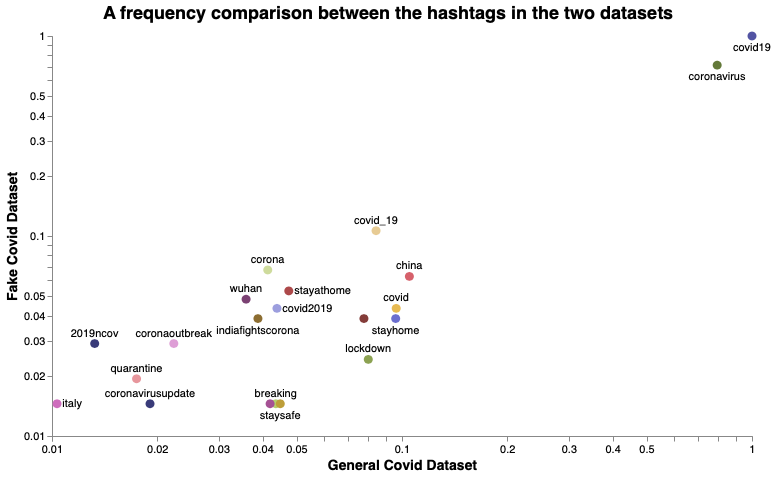

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042mEggsJDIIbRonH283Nm1ZJEwA1whpEDtZWXCyNAEZNxpZejQAdgAGEpl4GjIsNAAWMpkkBkw2CBoALzg0VKRZFLiEtABtUHEkBC70NgZFAH0BlBliJAAbE2TUEZAACQCgrPQAJhKARgBOMzZiFIBxUzhFVe0AYSv8tBLKU4BmQ9rDgAcZ3qAgAbADakUBLVQTIAGJIADWvlexHeqE+JUBZwBAgEJSKf1B3yK4JOhwAvlJQLtAgkDiBEeI2G5zNNFLokFBMMkZHdxA8nqj0eUQAjkS83n0MV8SmdQaCTgDvgIirUAUUzodDkUqTS9vTutY0bJzrd7o8VpKTWgTvCkSipba9TsDcFughoMdjuaBZbrSLZSdFbUcaUAacSt8VWd7RLhdLMXKFUqVWqNVqdS7aftuqsyA8aIsQPzBVaEx9ZVHtWczmrg1iSqCikqcmKHQHE18TrVQzqBN9QYdvkqIU3s26GRB7NArodfWXO5XI6dDmdzkCFfUAYdYe3406ZWV5Yrlar1Zrtbrqa66e70PBVvRoopkYpeSWLULD0mm7UBLW6q-CUtQnN8tQknGjo2keyanmmF6Zte+p3lOCTmDANhdHyX7lj+XxnAB3xYr8eIAmBhG1FBS5Ht8AKgpC4FroRwZnCUAITqhRpSscZo4X634wZiEFaqS6qqgC5FgUU1EVkeEGQjuoLsaChGggIhzBpxuboPISDiLMgDkYIAImCAKRggCiYIZgCMYIZgBUYAu-pyaK4rQYGx4pme6aXlmN45oa6CYHAKz6RQYy6FUWCzooEjFqWjn4WU1bMfWynHM2rayQlIHKnKJxFBqImKiq2n+SAigMBAbT6Q5glue5QKZuqTa8XimVCbKQG5flarfPKYECCV94gMINCIpkcBuEgHh5AKlA1XhQltXVJ6pueGZXoNDLWNFYxIOESDtAwNArKNsW4TRzkdk5sorZ5iEbb5k7cTtSBouVH5xbVXaahp5zEju-xAqBS3fT2dYCBC0InM1HGPVx6DCOMCAMPpsiInsCA0Io80XVWvzJaBqVNi2uIg8u2XEeu3WFf1m3dEw9jjAwKzBTjTlk7BnVUwVvVFQNcM6SAKxsFAiKyCykj8Yu13sZG0YAXlI67oqHOYn8JzQhDZwkhuxOgnT6DC6L4tuOI3xs1lyYNdqTVDqcrX7q5XZlFzeU831xUC6VTDvRAQUfed7OO7j7nwWt3nIbegsuCstAMAgFvtYl+O1iljbpaTwcy3Bq1eUhBsYK0OB0Ksid1ecJI4r2fV-FGdpZ1lrvU7ztNe0NeQrBMAcCQtIqqx1OXcz1Hv8yhgviDMftl87pza5qEKhoqtcjv3LuD27w98wX-jiBk4g77IeT0AwoVxNPHyrxTXXu1vbcMifqNnT3IdYrucrkeumm9qUOqX03N+tzHt7GYDBd40HPrBJKqdCbpxJm2FyId1aayBDrHEesC7InEOYJ+0ssoV3ntXJe9QV4NyTjnO660fJAKGkwBgwh460MeBA38Kc6wwLSnAv+69m4jwLj7OASJMjMK+BBZSMIBAnGDDqNiMlSFuR7H2KEg5hyjnqPrO+3RHiMBWLIeOeBkD+EeHSJhUt4qLTkTPf+m9AFR1KroYWygz6mK+uTVhacOFKi4ZTDeNNPbUIZAYE6cBdDMkwAYNgOBTDMMvrdBClDI5+SGvYtgjimgClsMLcwExxCYGEcnGsbCGweMzgg7OVjfGj1sUNAwOTAk0GCXksobj2HEwyhY8m5SW5+KqQyZA4gcBsEwpLT8z8g6lMbtwgB3TEkMiCqsHA-hontM5pM6x0ynq6SLIoBAbAlnjLIZ03hGj0CcmRHsq6CVCQwhJGSDWwJjjfALqc+4bhu64LIRDCiA51TKkJHKb4-cwIgXAvlN+9E1KVJmd0CAZBFAwHCBkHBZi+7LKTIc2+-j6aCkwMzJAXIpR8RGe8lF+zloeTiRHAuyAICImmCsbCRLkWJi8dfNZkKNkgG2jFPJoFwKDlUocfEDE9ykuds2YkgJ8RIP-ECJ5DoBSvNWA8XJzje4zz-ABYEypji8ogrI0Vy5sS4nxFc4kpJyKUmOYyAlZxzkHjIbE8O+crUowZZ9NV5Ngxgw1LLaG8tYyou7NXfsyiRySTUQXLlYxZgQHEDQUWdqnbk0dXnB6mL0DMgZsIRArRgpkBRooRFiaX7opsVC9Axp8j6HyEgcwxaymrIqXw4WNgXCKCyKqi6LKh5NqtSFelfs62drGRcg5jaunsvhiAfI3oSj1omd4nhGKendHCNYCYABuedY7F1TMnYLXRDNwHDqymuJsdZmy9iVGI9S3afEToLgios4Vqg8ijUilxtENQAXBLWG2EYhyrzogxIoTFawSNUuxAuEB0LTl0G6wOCVeybgYuxXcGpowQlXgo0SA4hxhrHOo9NnKpQAFpCXupfhqwC2qQJgT1avBSoLlLgrBL9IjK6K02tcPCiJRZt3yO1sOdKoYoSQ1qAXBVugUnIBOpgIdjLP2XXtXVUt6yp370RLMBVbymXkygYUomGd4GjtU+Oo5xHlj0p2QJyx5nl3lpAJyY6cBZAwfiAh0ZP471LrLRyytshAA-DBRxDSdCLaxIoKz5vVoQxPJU6tNnGMACJWIUE9SdoY4nOOSBRP8ISHDi2HVNVCkv5o87Jj9HqMQ+b3QXGYBYcmNMFcqOsQnyLqRJCZlTM8U33RK45tw-hQONIM+41pJTTN2d3WyjBWFAj4peo08k64cQnm3OhtUq9VR1mhjhkNQ4JNWuQHECg0B7C2cNaBZBc9dbisjVKFJoV426aUzVmbfbq1QEqyWjca20PglA1RQNs9fiDhbKJiG-5DvEfzQ8R41halICCgF84c10sksmx0+zfmp3UsRC9qrSYiqqXxGxESOpb3A6vj2h9VqFAJDehVYWAyxATAu-JbH6nx4siWyGMMvqowxje724j77wjSagGQNHinCfC9p8R+QKx4WNLVNiEE4JISawK1TtT+7SrvoYDgAYChwhPu+9nL1oYfURj9ULqnvX4n3ZNOcM3KuoT4KrovckQODVHmlVrVBAHSTQZaDgAL7PMQV2E+D8G4m+G9ALO+CPN14vFYSf5p06PnbykFc0opjGQVKRUhCzSHHHMZAMNyZPodc59fT1OgLswQteaThCYiw4ovkRiyqQFMMQfR+9QXDIOBhbIAmIoKARZY6YGl5Rkd3WsfTZF0l13WflxKlA3RfEy3fvNkK7Xx3Vq4jRDYBkH2SB4UJzX9V+3qe68YMZrAY9MuqPymtn8ADLUutJpWUv+XSXj82BT9q9qd70LMkt+FBFxAyAdNGk6IoQ38-0P9mpsNg0lF8NVFxwrVHhkBEQHAYAxgQDdcH8n980nEX958f80VOc9choAhERBtdlr8WECkxtjM5dwDHN6UGZmRhk588E1xd9UMlICpUDFE8MVFw0sDiMaBaEcBop4M+DQsMcF9f9WVl8Bs6AYA2dmCgw+drc5Y7dfdqC-9OCM8XpGcxBmhIDEQ8kih8p-gSRCRlIst1wgN6JGJ-hwNWIoMrVi4mBORuRYA4AE1dD8kCYilxtv8Q5tsWxTg0CJDockskBdAcARsGJNUgIdV6NIJb8it78rV3NsF6AsIeV0xmp7Z8R4CRVMcjwBwewa87ozgnd8gXdAlUY4DWCWkM4OCHN-NGZlgxgyA2AmB6lFBmQMhMY2gJBq89t0DJDCNJMmAoARtEDGpP9KjeicdBZVhZCkAGYiCaCC5EZRZkBDjTC+iG94VCDdDoZRNuiSYe9gchwbchMwcwZg8rUBAyB31LDzj1D-9HMDABlFBAoUdbVmCtiudSocUAAPOwcQWfZQ5lHXI4q1cE2YBAWE-4mnMwhvG1acRpUCVbLcf7DDH3WopMB3SlPtelUE9I-8GjYCXVXI4w7sN4kTWPKHSTPjFYyE4HKPd4iHOPbAkI1YFYHEsAy4wWEaBABAcwMaOUoKE6UgfQGweFQIaYKeMIppLoyI9g1Ei47YuxLkTAYI0IigvBfQ8MQwgCffChGk4jIo8XGTVzBkzI2jFk-VSkgeI06EoaT0EfAnLtQ0gEvEwWPIZQV9EbPPIzThUM3E6U0qOIbBcIQKcY+IdQVYeQOZUweDRQRQBTfg8xNkteP02ghkHTGgaAGgWspElvFQqglPfIw-YjTkP2E6NtNtBIPofk0s8hClZ1J0r7BAeQTGPky0shUbB4tpfs4gq1YY0gcYyfTGMYCUvsn0sssMpMoaRch4cQbJTALdDc1Qkw7c40oaOwacMfVoSU3zf0yshgAAR7gBfPaHkAZhWCYDYHN28wTKlIvIZDsFFjdJPKbK3MTMAu6DRGWAUDsCfPrOJRRLnLROI2EBwAQERBVUnMbJLVQqSwSHEHaH0iLEN2N2DMoLwvLJDwiRgyqDOLAqovPIfO6E6GijorIAYpwuQs3NAPvIrM0SgHEEeAyDYFMC+2nARzUGGPXO4ovn-P4oLjqQaR1OnP1PjJQuoqtURAYEmjoF529RtNtztLyIP0dKS3gELRoDlNAToCLORM9UEJJOEI2wpNPN9OYoEvQGBJSUCjYHCkn1LkYobS0uI2-JVP41UtjNgVnN4vnOIzBKOnFgmCgBMF7Lkpv00s8p5LcENxaDZAYDvNqytRjjYASFnERxFhSRiksMQr00yrivwsc2MEZhyXCE8yQvXzVFAnohAnUkkReOww5JjzE25KtVyp3jyRVFxB1DAjdjXH-ChEYyao5SGV0SMRjL1LjNivcogoApYu8vGCQAWVaF-KnIyKZOyL5W9N2r4uKtF2qrGEsMJJ1IjDVG1mhDKAgx+ntMHMS0czxUxlfEmqiq2piom1uviqSwwq+wMAostjWP-QqI1miJCuyqOwv0ZmMTOtU1+nlDoj+DVxKFRoXXRuI2ClWDaGgJgFgF6FkEWWCtJsgoOpI2dzOARLHPjUaTJ16gp3EnynIihK8pAE1LcCKve2HPgGgKiUZp3TJoIrYALB8EUA8HlXhpLN4upKHKSwCzgw6vqpYIiO2ohvAoHIS36w5TEECpWD9lSuUHk02qNvBpJrluZuFoWWrOuI7QysNugXUp2vArmIkIIwjW0oOixhChxp4shpWqnQCGvKawhl6k1F+HawHCWoUvuqSxgwiSYGFhhWYDbTGEPKVXVtwrRrdqpV6EcXdMuro2uqFp5P8HMBH30iYHFo0P82UBAuwuLPLmtIF39V+vNvr0Fjx0aQuq1WZJyJqNuq1v+v8xgAcEwGpUdr9uNpdrM1CogOCX0ijvkqysrpKseF3mLoUA7sBI5XCgeCgH1te0zoluzrsHCCJKEPWwB3AiGtB05NGuhCpSqBPswGCm-JmAeDLpnh32cvftEIfs7qnRasAfargFhMCl3lczqvvsPv2uFuPyUIbOjtNqhuaoLX0jUEuDQcr0wnAYPsau3sczRDYHpTMCLA8BgzAYvvDP1xtTjUT0ip9tlGbB3GBFVEHAUmhgBEbqtQSDfDgokDaFGLk3svwfJm1BcI-hy2-ixBusDoSNDUwLL0to8HkDwc6tgkgZQ2gc21gcvtx1c3jXargLxDXBbFVCHB1F6ijEkYerZqaGodgmhDYjUgJGHAkX+HriwcUvRMeteixgql8bCV2P3tghVA0h21cavA8YBWsc4boN0GwS+xZlvtqTvtl2yZ3IZHoAMF6CazYlUlJG6uvT6s3udkFJ-shz-qkfKlsAgGzVWC1P8pGKOo4fKe6EGeQAoECiWznk9xrmIXCdoflsc3GaScjycosbJNAy8aS3Rm9r7pnngJ-Xf1tm1wiazsc2k1hNgJ1Oi0InAkkhJGOG1i2fLxUA5HlQmmnDpN7ocoapjroctoRM9rXsM2dueY5R8vpNUsRuQLthRuHrTyrp6feFlq3sWY5XFmgOUGGagofFIZifemxZZqKMwi7leiChoFID8bVjxGDB+nojBGjAJDcsIdju53fVoXzowdKf7PnotqnRVsflrqnquoYzKZxcZD2OxhRamzRfxLZpgMJeFpgFkHkNvOlcX1lcFitqnwyHc2YegJ5Tfo2c-oFN0YwKkIMY0zKue1jS5ZDNOcfscz1qaBaB2RaClZ9rBanWWCgEnwFCpdlDPTqcvR6pvWaY1aPuIzYHaAkDgEwnpUVYLgGWCkUGIF8uQcTatWjdjczYesiXGPjTiZXqLkspKftYWcjZ1vEByQln8BZiWzWb+xEKsYdbgYjP8EwAAHJ5scBIk40DX1W1DK3HN8oShxhc2ksJAJBmRmAglHgryJ3mr9IZidSPcF5Zm64vXBYoBopTZgW2CNLNyg69GLW+FlBoDZgBkcBcU1AJApLoovzjpZK9maG-nNXSofW-WFAXxbCdTorikt3Spi4VnAOhogkA2yhzGm3XLQOGRjrW6Koy3KLs5eXR6YTypRYIPdSnbilw2h3sGC52RTBtTPXTKHTtanWSKEhCyQDUOC4EnxAIAQTAoIAxz7AvtmHz7B2zzh3+iCyxiIA7XkOmaCP0TXAr9SPW2bHBZopegGOmPfLF2OUwkGAQKPWX3fmWX-mp1IlyWB3JOK3ROZCeRwh2QD4sPqNhX67RWpOcmGRJoHA7B6BqpuOPLeOp0mBzBUqWYQOxWWaEBcAlOp0aBwoeQIBQEUygvBYwlrLTBvnlHNOmL3Pt3riFAkOsoNRHn29SJPlmWX46OjsBBBOouuGMySuhpmQBXzBlAyqqXYPuhLhiBeIIT+Hjx+UtQhVGStU8uZZj3zXFiomLDYmqbV9Wu1Ljb4WCiwq4BYn4vTHfxJ6sjrPWTDPIniNx9kRn2fnfaQXcP6uTllVjoOhMyV2DO33kvSoaaYAHE2BjAHHXO9q1vkj2gtDop5S-XaO79WydbomyKPMqai1V2B6bdBcTKeWvvzLHN30jYxYJZGlMv-lIsyIex9vUhQF0uyFLd+cQeh6-Phb+24BDhmRTuNPlMtP32hpAp6V11kYyHdntvUfZMHOMe6pLOluvTUfJ821wTyu0IBFZAlH5vUfTBiBBeDa8Ywa9u8f6OZhkQxelNA3amL0GnerxFUf5C4BSAckeeHu7rHW+PyqeHCx9I6vperV9Amh0rSeqxoXjnNizenSZpZAE3deiHlPrKmCzvyeLuhpvi4Dv1bfP9JvvvHMIk4vuBWhjAuOvekujOICaBDFHxUtlW4BVBeejQAg1AfPgo+lab0-0AaA-grmY+K64-zmsZ3Mvm3BsTXfWXvZ2BJ95BTfbORn0BvyWeCHY+nvzn44qgPN8+QBBs6A42tTU+4aIAfZ6lwp9PSfUeVPbANfKoEddAhX2ecjtGu+zmr7wgtMKAEAmBtMd5n9Z+HektgpMIDAms35XCNHIQtHOfGHW1PeT+W-xWIBlBgpxB0YxgsYTp-WB+XSNfEviJ274cp-YLnYAa7TL4coFGrgVwNDDKCRIxAzfI9mawWKh1iMM7fAqjAniglQGA-PpEx2Cim5oC4QAQC+DcwD8DA35MqrCROCzBZ0BlK3EZVB4BpX+LNHwMFBgz7sZyJtTfvr3xJDd3oHNRAFzTCJ-BoQo7QcHlFVDQxZ6ptArut3sDqdtugbJOq1lTrBh06eHKkhDwo4cpVamCAfjAHMCyBoosJLztd2qp3cBQE9MCCTjlDApRIlOcHi2Uh6rVTB5grzjdxsEd99MgfZGg7HYHC0sYwJaKLoi570oX0oDE4AP3kDbQTuJjcXuEXXqgtT+jmWgP0gH4G4jc-fHUsTkIiODycpIHQW52gFToIAk0GDP4CYCGJ4gTA7HraTYGrct+U6F8DoiT70BIuOpVRu-Gyxfw7+v8dIatSLglwTo8GLii-xaECDBYIXRAEjjhqYAAAX0Jz-LBDI09gPgDRwe59d0B0hJLFHxzJmBEgPA-2nwN67DUPi7TJIlD1kJlgQigwWvtpwPRTtMAnIetk8Ip6VkoAsgCctb0SiLdPS6-VHobjsAUBwgMGZ5MXymHndyhgsJkCyB8CBEeQqxX9OsUCGlD4i4hE9gN2IyuZVOmZaAggEmhjAzAyuT4T7yApIgB+KpPwf41DBygwQwTFUD2E0io9oRqg04MDyaGc8d4AoLbglzJ78C22pUewOYB0y0jlWA-OwGND1Zu4JE0zddkQmD7uC2hKSHRByMFFVhAR09BusMKnTZsyq1wCkXCNFG7xooyLSAai0pHdBBs8QacL2wbYrZ1mzbHrglFaYjVrhfCZmDLStHOx-cKCFsGgjuxWoY2NgJ0Ua1dGo8c6OADlmqz9HLg3au4CGDlVrSfc3B+gqdAVUUB4BLBj-WgNwJNGgDcce0acEdVhSyF5e3LaYSKIDKoxJoA-Z5CaDgDP8Ge+o2YUnlBo4coiKozMduylDKVwonYhMbBEUHZ1XA8cQUN+QF5lZC02Qm1NYFHyjFfO6wqJiaBY508B+VQkwWZ1RhYc3qoYFUPUGJq0tCIvYheoIJqrDdpgNhVfkCL1GriHqL0AZIuJbokd-hq4Z0dBwBxuioBxYsehCKoDSiHgSwmDAAEOJ49OIxMuxQFz09BF4-sUIKZwixYee7MIsZSphKwUwmIvXrWIZBm4xg2yKsS-DXaEJvcm7Mjn9T5aCwMKsgTUUL3bH64Zg8GXKrkJY4D8dM7w2Cd71NEVcJoOAAUPHAkB8MYRPE-8aVAVS-FhuqIo5hsThaMSkkQBFVoKyLGtDEJV496NMEwA2FRuH45rMnTaxaDOsvI1GH3zhSnCN67IuAAwERAAA3lmEkMwY1jpO+uR-AEAH5FFAoxHWtCuOcl2dug5gARBPhEltjHxSWBAAAEvYS8aVoIwxrQ1cB+IRFkO5N15jjHM1lSqIjBOizgCBVQK4LlPpT09BRjPZBjFMTotYU6gIIyRnTCmOZbKgUNzAkBY571xY84l6Km2kn5DQUwjUDAxHAjiNzx1E-XFYOii+CIxUDDZr+LJQZiEJpXDSRVAt5mA6RQo0vuJL4mmwZMQVMbljwMIYTox8AeIfkGj6iThRLkoaIiAumMDUp8EoaWB32L6R0Yaga9gJAH5kVog2SCADshyQwArpI4njrxPwluA3AsgX6SdNWlqTSormGwFFIslpDapHKeDsFAqixSTocQBKTsMuHCkxqxGNkBMCMBpUxKxwl6n9K+DAZPCzECDGxFhhOl4gMwboWNzZ73ibOfk1viADjS30mwA-RGb41OpxpqOxE4Tn+Ihl0Fe2SMq2owweEUtlpYhXDDiIwFJYHOwQPaIx0wB-EoWaIpGrCyCGa0bpaHIaNq1WBw0BkjHfYkdwdqqSZhpUDwHDWrJzcDaqPeNFkmP6cjPxkYmDgpIqawlCpy0iXt2INLwyKhsGFIsEje5dN2Q3E06f5ICg7x8cd43UczLgkzTbpFTUBMLDqEKd5GLvEmY92FloRa0etE+FM0rhKjyJJCVwWZT7HJl+ecckVit1hFrSKm8AYKBuNhlS8A5gsIoPROSEg4CEXuZePM0TkVzZp+stgOYAqgFp2AXM9tHF1MBpIa0qwjWoPPI7DzKyrQBJnEGRgRzwZlsoaFJPei6TORrIyRJJGJAgRAmYIAeQoN1kYIc082d9DSJQkmxxAmkIknjX+iE0gYxNVHjDyfkHytRkHRUWRP7mo9AAQnCAAQOEADkcIABY4QAChwwWFrmDJAG5zbRmEPJCjSjAB8NZH+QaXrK2hMByGCTKqhYQAC3BLC2XhIa72AxgUAfBQPx8DJt400sj2d0CHHBIIo6ZVuT2OYUF8EgKwAWe6NYGKxyQ2EmWftj2GWtBYwsXeCTxdkBNGRykQkCyLCYgjiZ-wyRIUJ5rOD+aqPRabfVfoTTm2JrduZdweBiVKoa6Y6r5PrnIL0AfsDqbfT9jRSWgW8pBTvKnB7Q-+IQd1kwuMV0E2gEwCAYgqFluKjQhiOyrMDanzSqaqil2UG2V5XpVeLglmeKzNwvpIoe8iqI0jkVBNFFoTNkdwpAAVZlAKzX2akLbnJKWavbH2WUHsIKji5QCqaTKxtEF9xA9iEwERRKWJQAhWsnCWlP8y-CJ6XXNfnynkGRzWZaZB4PmRkX-zsOZSrhb4q2jMBOlr8NRv0Nyz39TW2I-rvLKh5LKFAnzBgFb1CkVLhaXEnxScrPYCIxo0BBmEcuKkFKMlEAYgBAFmC1CkQKI8hWdIZAUB44zQExNnNwlfLNENgEilYrEk2LrUL0KaMN0QDzi2asAThf7IuVrjWiZwXRdUtmW7d5lyK4jI8ERjVD9IswWmo8C0z+BnZ9yhZRn3P4pJHgC88uq4ooXoA4KSAJ8mCrGXitHlf3diehLYhggIQUIf8JpHlCNKI2AM7oIjByRchmJE0Iub3I3ZlydZSc3BdxBNBN4zgf8+boG2v7qMBhP8DftvMZWs1UVWk28au0bakkoxmy2Wdsv2GOZ8ZrmY0QCr6UN5ZOagZZYzPjl1zwVISplfYHoAtUzkPQ9QZVLTrGSCl8hWtNJgnyuqQpFKnFQRXpwbiW5qlHUbXP1UMqgVAUKAsMUuCLYU1QypmV6vZUs0JA8cWEjrwBVu8p0l+UjJZVIz6VPlUc5LH6p0kz9jl1in1RgF6DsBdiA-RGOjFBLur-22KjtYaoRSxsqo40l0e7MpXoAyCKgXoA2MbWszNeJcZHNEzVmVq6+506JtCrIVbrnhkMlBmulvbCU4AMcE6NMoYmzrho8cAxMjAZgkqPJR0RvuetbTsNl14rGgZ0EiTpA6SLi4JYarMHmBRihiGkTQGMApJVW8KUYqeo4lMBwubE46S7I9VproxOKdup+pZptKiSJc-uTUpqnxrKOw4j8Sk2cYaxSQGTNiFkxvXj4LOqa5bumsA2ZqQAedBFP6xeWzAIlWG4WhMF0Rxo8gvooJdNKHnJy8wGUqgXBQeFTrvxMDG9TuyKAACUk9OEWAEDZUGqWNWMasuctHUsbMYcmMUTXMY1f0B8WMjpt41RVwVEVh7XTU2o45ijqyn-SgTxpaIgzZ4Gq7ud9UIj0tiQxEQjbZtZnPJtMHzLcZ4HRiT41AnQREtkPGCmKr13cq2EgTt7ySb1GQDIHDiQBaSuZZpdTRmqbUABnsgMQOqBjAYAEUrGAImrazE0BIdW1ZbTCSmAyAPgb6bPLg3XSlV0GRhulpUFxqAtb-DxSkkSmkCBQDwZ9b20U5A9DKg9IwkRstoPA0Qei9raJuVW2KQiMwOylGocVUCKok6nUuqAaV1wCNOEqtZIpFgD90YgQIGp0T9kkw5+0BJrZErGAmqqmv7VrtqEBDghNIpQaELuGmqrwjUeIYJtcnNTkhXN7AD5WNxubfJ7mfyJ5gUqKLxASWCgMlrSKw7ZKmRuSo+SZOgKowL1fa8ldetm1x0nypazXow1AT2A6VnfDTU2tZxraGYVO-TMOqRV9aWaO7BgO0GiiIxGdiXGnazLcAOBkQiuelNZRLinqAN1osVegHoJpdbA4SONI9vxYVRaaLMRrXAB50rS8trMzlUhrQW8qNcAqt+SKqPC7DatEirhmzTT4uaUVpoM4FiThUzp3NvC2NYTtZ3C1HlCJI6hrof5ISmOpgTmrluY1NrrJ0USJNdrmU9Fw1Ns4xnbKclu6k20UBxRZ2Z02bvVhq8EsypuIMyU9AdfLtfKkbXcB+tAelDyERjo9k9kvEdWnpY2mk4ApQaUfYGrIyaLVM6onTJ3fAS6mlUukAC0BraK44xDu23ZgmwQySktck7WUvKokrajVtu+QN7vh1NTLKqwPeqetWDz6b1+Ir7Keun76RJ8godfW3uTLVkoAxA8fAfvj2ikm+VQONFtOE1d6G53Qa9mxuCJPgYAgyj0p6tGUod89xGA+NuKESTbmB02sHofqGjINUG0xRydWIv0Wa94gPBmd0q-zfzR5T4fhYvOr1Nq8g8GaUaAn7W0pLCeVHTRgdZnXsyGHkkctZtz187xWGFMSvQHYDAdKD5wrXeKyMb+sUyeQVjuGJ6FK96mCSsNpzy5ABARiIlQbdbqdIRd85AyIBuwriEKkmDx27dVtClAxjKhWhHQk6p-0-dfdyI+jQWs9VMbJdD+gvsQAgk5r2gYE9oB5LKqFU-2leyPaWQDE3ZgxnxYjPEFQZtbs99h1PcWuFoTVd9G6mgJkrNVfiW9P41Hv4bJH7QjNHPApZEYEnWSvpLu7uXEQAgQQNYEgxSE2FEXzEzdBcSI4oR+JS0ipru4g+K023BJXAa+jyf4HgCmAGY1QVVsmoZkMbYj5c5eWJtsW1HPA4gBo2-sAONC9pDywI+9CqbBFWOQUckdtPNUuVwjlEkevkawjMhdA82Oo70eCD9GD1Xw+mFUFbUlGEtOe5g0HtZkVZzAu2sbr0Jv66qNlN6qNZrweCWDjody0o74YLjGBshUANIuhMFSIHTgqPKzOJWSNx6yjbOuytYFAST4baiuywsdhrpLaOj0+x5cyp60vHqDbOkY4hyY570FDOC+7L7qs1diI9Ph7-R1sKIPBlxOJgpS6UeXzjZAbNTPYHqMMQqpJtumpuej4Ohsmm6GqpquX2MK9IOMxyxsbv+nGGhYraewALw8mEVD4WhMYWgfpXHGOVKScWMsAH5shyWwgRhtUfEPZ1QRvlAA1seaVCxGYMbS4OfpBPC0U2B0fLTkmIDmnXjVqRgG1TbW9aLTSbQSUkeWVQcwjcm0A1tFkBlZsEWeu-aKtFORGaT6EiEOIw0gtgRw3Ur-SwZZqRHntVyq-qss-jrKhh8mjE1wGiNdShGi1URv1PYg+6p2SurDqRL7lzNheWvTALxBiPAj5jCLEquwFVrGyGzD4v090C5XIaZlqG4zcMfxMVnBTk09kVcHXW+62TwbFXgIYKUi8jprY10w6adJYQo1vC3hbWnkCIpPDIZ-DqKagDQAQiA-QAAWKgAAadAAo66AAl6wH6ABV0EACboIAAvQG84AEPQAfoABV5wADodgADIbAAKD2AAXccAA37YABKhgfoAGaGQALcMgAKYZAAZQyAAShkADXDIAE6GAfoAC4QQAHwggAARA0LgAXhBAADCCAAmEEAAcIBhcADCIIAEEQSTTnQMA+A02kzHU45jzpchEQGpd1lkgkBpZtp3IoY6lo8XmAgkj2qJR2YTlunBuUSlThxb0nBrDJHWfzSJdFzXFyz3NJwXzVxAC1L5y5pLIABE4CBYAGI4QAIxwgAKjhwFICnS4AEw4QAExwBl8y4ACI4QAHhwel0y4AAw4QABxwgAGThAAwnCABqOEACEcIAAk4ZrpSezPEBm8qJrKM6oPQ2TQEnFB4KvXosGCAgdgAZGzXTHLa6suuvbW7I-rCmyh+5nM-abRPu72LcXCACFftkFLOh8KXs6FcVMs14Ur6TCCfEihtTkrIRzK76ZgMr5bAvlUhs+t3i1oSijViHaRswWySUCTZqbtDUcQYr+zbRrs7YskNsWC2LpzVQKdCOzH2rclg4SQ2dOp91RqmvhZ3tDMQqhi17FE2Vdo12MCmsqmZkQgonybNhugZmB5uBMaWoeUocHfounVZXUeTpunr3pcBchNju5kUxCqaP04hLRagqwXE3UfjVcn8vlZrkFXfzyA-uivTdqoOJmcGFLI6Z5zYqLnqrTJztc9MRiYaLj2qtZZoyzNzXUgjDNYDuZQ2HHFDh63eTmbGFFh8rmNvhA8D3743zr1NpchhAlPZDbKt+9tZta4L1I201WrZeIu3j2Blgc4wk1ipZ3i2YB7AYWLQAKbM9OQl-OK1OlhRVHj4vR7m6PvRE9L2RxoUGQze8MY2arSrFLPQCjXikpz8Szk2rwKXz9Yx62+ZHQDRtEnbbhN9PWvOsAQ3DD9+iFS4GwDkmHpBpj8eNzhmUkC4sKPcVqe2Sm5kYEnOO4zdVhV1kQWheDqYCPg7jbD20wBVWbuuJ3xqDwUBPQb9vK3iTP4KlHI3TK-WHg7Q54wcZttHGRQj6W+t+XGLTXs7qKQjoiBoHj5ArldyzNzeOgT3TyQ+VdZ3FrQ7tzAAgWe1QXntohF7XnbYV4fRvd3EwQ+BAFAFXtK2D2Adg+0fiPtr2Lo9HeAG9EyFjQWYmQJcsXuvtOQnkJ9RbX9P-pAC47vxlLZPYVnnrwucpBtS0f0Nobh7Be5fU5xMFohEY8piBlxdYE52MabDd8ElN3gtpXtWdruzoL4RVAZ7rVgxa3rntoOOFOpOG8CGJoG6tcqDp0tKaLsrBHghgCrY9YLBVXO7e9-ByVSeuYwh1eD+h-H2loCI6eurZU6NtPu8CeHYVcaKI9jvW3uHQjgbCkkRBqkEASO9-XXRZIJmhIhHcQH-zgCamENod5RzAP3KS32Kb9xu+iX8BVLVd-ulJH7AgBBm+ThOG3lguS0T717fhQxMgFhqD3BHUD4jKqwNvmLSA9UxB0zqCfGEC4awQiQqkCnnZiHX1jazffGoMAd4CRoSTfojx4nBL3HKlCBoscqad7uDpR8E6SyMcBdKx6x3o4XLIAfAtAXQG8KCl1Oe7tJYxt3UMTObwHH+yB7E4L1VMO7L19+wXurLVl5SUTyBEPcGfEZXkmdxR-7f3sfAC4SOYGfYBwdLP67591Z32hlVSOzhMjpLLUEADwf4AGOCAQBc-acX31uT10gM3vWsttAHjmQKOMEiR0WEDnj8fcc8cwVWAneSNcLzTEiqXJIkiQcGY6uI7R40z9KA1RlaONm5n4UiQCmTzqK067Z9lZxiE6177zZu95Z7845ThA0Qmcmbg5P2U3O9nuKlLMMVkCzBqy9L1pTJlNuaykDlTxzLCRMDRTMtlL7F7Y7zPf26cwxNdJVZX6HPLJ7LjlIRMnzmK6KURlSvi52dYuSgIeWtEjpHwCJ3x2zzF4S6nSe3rKkSQG4eV5cquXUfM1zO5m5WcWptOPGbWQ5hwxX9I0z6ggdpHBHbIXgsEPWHzyeOmHbQNsW+k-ksSz0HjDE108joAcbHnQpj1yYtf3OvFe7JkNo03dtIvHMYwHFJaCT4KO+zszl59v0wAcahxhYxVzq5jdDQKrYJf1zMoOaIGy39nZUpG56Hk2MzlNsO1S6Sw2T4eBkzQTJZhASNJXU6fQJ4CelhvzedAemeU4Jd1vugFV6riERUCcP+TmK0twO8FiuofXv+oKZgF1aavprCLzs-a4IrrAUyI78VwncPevOqmK9OLlG9HOrvSoZwfFZyDTbrbPnk7pV7q52KpZOJppc0ls5mX6SNBVUmS5+9FGpsMX0j6d+gHGbxpZgDVs60u-jvlKL3ynFBrMERgIk4PZVeYOeuaCjuHqOSG9-mv6cDnU3HKHZLAOut4bqz97oaE3ywoRJ8PBFO+-UjFrEftHiLvN-iTYDXKyARduwA4CY8vNY0cAPix0XY9WdZrKHwOfYAc4Vmy78q9S2M4VwMIs577ld2R71efNdiUZAnVw6ne0eGQsovQyR6k8+OEqzyndj0aE8IyWYJDNELvBs9x1goywUaDXbsczAcCLaJzxGXpyJWUYpjwz90AawiwjpgXzT+215ujObHuK-BfG5SEfuoPIACqOKNj3uOEvGnrj9u0eDtB4vZQfd8JcDdJYHP9Ic9cEAg9HOkvJX4IKn0niBOKnEXj9mmRq+nXnHPnmEo+DapR9mQx2dr0NGq8FgD4DRvrxU08A4ArbObmJ1l5NI21BQYes98h-M-Q0RYYgEbzO9GG8KN3SWIdxisONJfpwpAWTKYDq-hfpv+sslkd9wFteFvVeor45nQoIAJvK15d5B6C-oBVaNSeIFF-S-5eIHpHs72hB2iJ4WgStSymgqBQMiclITDWEl8fW30pF7qgr5DZi-begC2k52zwcTczmuTb3wfuEH7acUljaXqjLm+k80T6UAZ6a--e8d3fwWU0F2xyeTdJKyfVsjwOVO7fAftBSXwAKETgAAGbAAie2zBAAFquAANutmCAAPGsAAto4AAgawADE1a39AHz9mCABBmsAALo7MEAAR44ABFx+Xzd5Vu0+p0fPwAD6dswQAP-dkvhXz0FfDThzRR5iT8MsK-KfkiMBRIbe8tWNeaE9OTkIRPlJpm+hLbwYW275cyFHwg6hzr04-H7by7brgkLJYN+SLiATAL4yW9e8e+qRZAWErCTRC1lLfYIp7-p8S+4+rydgNYIs8m8NeAfDXP5fUhyQwZx+lv8Lu5n2gKM7K7PoD6Grj9O+MhrgFoAiNZDshUqOdOjRO+1ep-K-73z2rTWJ-ZwkPt3rv-Vr9UGBEQxcWGiM5++z-9f8-6tY1f7tuOSfU3ln9Uhpen56XLyl0tslpeW+-+Qul+vb8LVB-TXbhiqAkxOj7EKoMAVhRV4ldp-oUYS0gWdnPY9-Gf1J8lvRzHRgiwTAHzRfWELjY8U-Sr1x8oAyfF0A3AH0D18G7epwSo8UOknKhVAdQHz9EPEAPj9vYEKAkAGYQilOxLfdsl4wVZPi3q8DPH-3QBVWCISAZ9if2Et9XAeNHgBsAELnsZvvffwr9D-WZDUBkQKOzhdgAg-1AD-MYhUwo4AREAikIAdoGIVMAeQPYC1AKPijtkARQCj5LfE-VNwCmGLkppTvQQNtEJlBD3X9CArfy1ZmQWALjskfB-3yNTAvWjxd1PMf2MDfVHMWsDLfVkF4IxgIKTwBNXCQFqBLfcWG5AnHUJGekn8G5XK9LfPGykUmtGKycCzjHFHS0v-c90kCp0PGxgxDlepEcA7aGpFVkuQL9i4B8RNT1H94AhgJAAkgPL0uMdVTM3sDCiTCEXdzAiQKID24JY3D0lXJL1OsNXBvxOgqld8CjV3pQJTKDv-cfxFo+g-NiUARYLgMt8ZKYxloR2gNikt9RiMgAWR7ASYRQ1qfUDwDIgoEBgHsWXGFjZcKgkvU+kHQOgCLsCqLwPHVXkRTTQDdnYPyqc96TGFmAlaPpkatKAgwBCCGAGwD4DxAgQPSDfPFYHXRXAFkFMDlg5HXgxwTEIEt8KWMVzgDRgtwKcx9oFmDy8N-dAI6c3DX1mVNMgFoHoVGGcwGTsFkS32aBk2IwIBDIZVXW98CfSgOblxjaf0tgLAlHydZZML8iqYYMVIMW9WgqkQHRrlS30eBwgb8leQaAWEjaAUbHMT5DQQcULuDlXKlGIApQvpw48D3ckOqR+reHGzdnvNEPuDH-Dtz5lzAb4DX94XP7zM8uQ4LzKpbgsbkFU-oAmkBhqHbYO+UzQ5EFT4mOfH0yABQi6VmCzQ9uxaAZgHQIUt15VzBSwGhXaRQdcff502EFgBv1hctvUPjDx4UHRESCG-Mlh8An8HRBqRLfZdiwQdkYI2tcgDW1xANEQuIB85ZwNwG-IzjMkJNCTkPFhcdpMMqk-IBRDUMZCMAqp3sRZ0ZfgeBxKVPnjRY5aULtCGuexF4V-3BsJaDLA0qEQ1yTFkBWBoQPkL2h5ADMnpty-egLGCi6HINRgP1Uu3qVo-JTyZCDBJYyjVlwkEJtkFWHsKS8xyD8jyExuAoVJxlLEoVh81g7ZGCC7wsvyHD-gisJABFyTAGMdLfa7nrCC-TL0RDjHJVEhZ4QtINfDjHMPgJ8OQuf23Cp0MCOT8XA8oLGDkGEfGU0IkZjnqkcgy329DlAW5WGCFwwvwqCDXARFgBPbPtj7tlBAZFsAWxcsJHChoSDTfdNg75wxEkvKYifwFXeCIRDlQ3pGCB40fYnHMMfYCM5CaIgJBQk62FYHwDmgl8KEi8wcfB4ii3ekIOQ2rQHCS9PbQFykse3dOn-AkvWlHkjWeRsIxCksfkKpokAcSP4DFw-8NMA40AMLsVKWSOwocBIqCKbDzmXQGilnlIKGvorg8QCLsHONMOPDcfeg1Fh6DaoEqgUdKWUgjN-aCN886JBQA4NqyZKmjCOUQAAmBj80AAdhcl9AAAobZgQAEXRoC0AAFsct8FUfuwMg6BTCJmA+ZQ3HTD4cPaC8DXMdg36sGrV9Cw5iSVJyUi-IrpnG9GwJzQgBUZKn0YjzbIvze5tNZECt17I8KMciEZGSI44IAOSOoiIo0qB2Z4o-lnCgDQv4LMjOI1dDKoslLvFuYfkB5n+QkvWsg2jfIioMrdmQDWzy9NFFSwkhBaXHzEA6bdQDCj0Q25ySxTAWkX6Qq3Z8NWjXwkKCChs0atnqQR-PCL-C1o9AFBAknDvWLg-o6AiLthiTAHND2IkCKki2+NHxC5mYGgQBiPo-CLGDAABLnAAf-bAAE5bAADXHZgQABE+wAAGFwAB-u2YEABOocAAAWsAARUdmBAAXYHAAH3HAAVNnAADVXAAF1XLfVX0AAazsF9AATBq-zQAHcawAATx2YD59AAH1GZosaJ05mAIAKtIbXHkVDD4OEDSxguhWtBoFlgoAi1dAY1wOBjWNJi2cVYAIAjEjGwdgK-JknEaMej23O1UtiVaLQh0xCwBQGbs-VR1XhjBI2aP1kEmQKDIA8vHaRYFceCoPXQPnOgClkJlJ+wawv7D8W9MnnYUyrpXwDgOWtPNU8Qhh1IXzQJBewtvnB0Qid6O7kagim0D8ugvx2WVLQ-GgBgiaLONSAS42+maAeIn8KXcC4gPz1Uug8IVU4V6TZyTiFYqci2DYfKoDIBvySqDAgVcG0PVx+VOhz8iIkIIKOixg8qkHDfw-WK+j-FYpSsMdSXuJuj8gemj9V-AJEFFs9YhCMRDAgeAB3hiKYKAbiJIz6MRiyoDGCOlpwPT0Q87A2H16BSwqaPVE5hPkNAQo1RYXKgxAhkOHCvYxuXncJ8UoL7NH4m6IGQXMEjRGCEYgBO6ABeT-mCCiwYM2gTPY2WIPQQiREHicEVGeILCn2XCIxigY18IF4ZuZOIID-4tBOTIc2HBINjhATBKll0wuv3jFbAo0M49EQiE3pRBiEfWoTXwscInwoNGWP0ju-CJDik1AA81z8RE57DsFBwDRWvDmfA2IjpDABnyTdElKuMxg-1TwEz4DgrxyrjfYIE2gMDYuJgWix6G+kCkRApuX55JHa2K1Dt4eOH0g4aAfyaDX8XqKOCxgpeiDDA4u1wNjEAZCMClgkE6FfRBdS325RuEq+MfVCycUiE0UEhyMESOUTUwmhwbEJNgS51QBnzQ5XS32zRKoIKE0CyDRJIoTKeeAHsQ9gARKej0pSiKNciPMm3TNb+FuNx9cCF2OyQ2AbTVz8aue2gwi7-AwyS8EcKPhzpwoPVg5Y+QkFWa1wDLpPWAdI9VD0iSk5TngBbaFF2YtjoFIgvwjEGtDziyEySKSSyoCcXGJkw3YjWD6I-eI4iiE4QHaBzYXJJiT9bAwHqNgoQwANtIk-ZJgS8kuDliFTkyZLjp5wZ5NtjYkkYiw4a3ZxOYilZIxO9h6cTBxsBApJcg8jqQlJ1k1nnREJw1CnPwl8ppMS9XRiF4g+INi-VIkPVlRrPqIqDGLUWFR1GnOyLUVVrTKyS9dAA4naSBnMYN6AmElDTATg4uowHs3hE6F-sok0aLOTAQr8hITu4-uiVjuLMYOvYqlIa1pSWEpUKITEAOLj0SnErFJcSCw8VLao8UZnkbcrEmUKPw5Ut1WrR-dPhWCC1U59GUBNUrzhsBkYPmTaTlUquJgBKhcLgoYnNBv3QhNHOFLCoDzTwPeSHghiwPN3WJ8JRSDkq+MGJwTMFNXYFPW6wVVEQn1OmAlyWNBZAqLR73NjnU7UKdZrA8ZlcwMWEyJWjMYxELf9EYdwDoB0yGnkic3fUh3kSdkS1zoDU0g2KN5ilXDVdcEBWpSS994fcSZYPqY8S80q4q73VCEtOlLGCMWMqi9oxyEWEeAhUu5NQT2U9Dj0RwOAlMsSPY6JJeTBYHWzo13E4A2aFEQ-V0koaVPKlf8zA0yJLTXwqITUAYMYYjkZMI-kPdS7GARzWSHk+mAi56Ufyk1NUQiZI+TDfXn0AABMdF9LfTKMAAYwbOBAAUK6YQ1pUlkJADXlrN1ALRJ+ckvCq1VZmxddJTTCEq+IqswHGOOQcg4sYIMAdkUgBUiBjYMIQzD4hzgC5pk1rWLSoM9ZLzp9lUCmmM1raN3ASTUidLZSp0yGWdCYoAsEjDzAVtNWTL49ZL3JxiY1yDUKpaSy59cfCOP8SOw4pLvSx6fSAYBkRdbVISfvQDxDVqpKuNoQqaClzXjnE+3mDioNFJA8w4KLMnoyY0x9FUACksZOidT0odLo86aFunPYk9acP6D-eBAl+Tcfedk+soUoxVcSVATCDgiXZMuPflR4r+RuiToUWG7p545jM3Sr4g1z9Up8ehDopo41lJtiXUjlBsl+Q-1g45CwvkJCJ9lQDLQyPE-MINj-Qv3yuM6gpLyqYB0JqQxU4lRnxUTmI3ygoACwD8n0yZnchKMytoFqSQTgU3320zQxZWX2IFGbKVCRTAaYGqAgkgUDBii7RgFMBMgcAMt9AAGoH+fICwAtAAFrHZgQAA9xwABZ1wAF2m2YGZjAAH4nAAEUbZgDmM5jAASrHLfHZHjpriTICYCqgDCHaURsqqJayYcFz0CA8MxeNCT6UKGRPotM01KS8Zoc4JqjootMWuzivPgF-jMeeDM8TXw2gFIBDXSSh3gIsgdMnShM0qBC4Cqegy-46ACFjUBqsnbnwyz02xWDlZxPeALF7jQsgnU5M9qkqh8orGDeUuEhUMk9WErxIyRR5DjMpyHfZH0xzhoZ5S-CKtAZGtliQxrkLBoCaQwlS94ghIez1kndgmdHAcXFNwvJbeIejrE8alUc50vMIXSDY55QgBBwE+xzDBjEMODjinCDIRolMgBzYS8CZWQxUA4+dLyzyWWgC1IdvOKLSzTc1qN6AAwgXM9T7kurO6B-QhzkTC1AXWzezcfWGhaB4tRD3XiKgmpAmh9IBVHztbBSFJ9NoUg2KH4qlOIBJzfshi3f9WFEXLaBpwZ-0tBJUyDKFzmcuTI-8KtVPKb1E81ahRgPAe+J+9KzRTyS8KASIImgJgffnHTIsmXKUFwuFMlaApjSjKizY0qVxC17U8KTODM0+gEuDi8ksSGjDlXHIuDpgNnN3gS7P+z1yafK+K+wvTEc3d8xgtdM1MCCRwCo9K0pLzpp40U9Qa14genM7zm85InSB989QErxxzMpybyVUtw3PzuQdQD417GCPO9yKgvjEaT5AYuE5o-hW-Krj5OKNUe9cQY8QPSTAEOJIp-ci+MCz1ki7W0IsYAFP1lujeow2NxLFZKgKMcl3IrRxgX4L-jDM6jPLcJAMgFpQJMxBCjAdo2HWy4qbREIGRmYMJBvTas-AvcUteblPGSGC2HN3k-M1wAQLZkRcXLyN0jAsYLgVZAHaoS9HFChzBc1FNfDaEAty7TMgHtj7YmM9f0DyxgmsPR8n7NBhZTocqjPYL6s6KAkBN5RI07cR8-sXHJwufzPQKc8zAs5Q-VIAkY5lg-tHPV4cIKC4LjC0cISBRYfYm4IHCq4IMABdAu1kBs0DwGYd6CvAp0LxVEYmFgHnVwt3IpZY6kYALSE-LvztvBFGFgxoVGGLhe2W-zfy18teXFgWCxylIy73Y4NyLFaQCLRzSlaAuZzNSZoCy0KU-70RDl7VQBwKyEH5OlSug0-Akpyi-L26lCzPqVAgSzXHwqhlo3ApYzc8mHlposiyP0UjHMmFLWA-YYQwBzWeZQsPjbUv1zy8yNNJko13GajWrzXAT9n2gGpA9NNw4gYYqnJb06LI85xSEDR6y0C-gssLBC6XWWIiVUSLV1t8zcNh9R5awGwBIg0uLflrQyuN3ysEQbHbDpCn4rb9pMkD329GHLQiGQiCwgs2ivkO5l+QsuJLxOABsrQkmhzAd2L-ykvAqk2F2QEl1SzsixELsccAcwExLiAZFICyBCsIvQBAAQC1AAPU9iAU4DyhAAL8VAAZQTAAADlAACxVAAFz1MI7gBl03McaB1yMsYlJIddHKwswTmAAT27VAAYeB7syQsXyToRp08Bx8KOPWKRrMfTGtg4lUo8xC8+Tw3Cq8vyKwDq7XAIkBk03XOlTlMpcPuBt49gO3jPFaXKSKGLc9kRBageOkQA86EItGKrCkXNXJKadiybkdYxUq9T1kw4BTIc6VHJN5FxannF1fQ4nJeQwYy0rOK2Ci4oPQmgV9EbytCrvJ0yhkOAEkRVWAUpbEJgFYHCgjijVxHJBQFxzYYPU6kvuLaSkAHaAGrTl0WLWC0IvTLSoQAGdNQAH5FB0tBJbii3BXz8018LGBpwFsVQDiSrxO3iUyfHNMEfsqctfDbZL2QERYcGEJgwVy4IBMB27dcswBNy2HAi0+LdhWdKq422TGhMOYIOEAdxcIAQADHF9NyjZgBKMAAP2sABPjsAAecY-MSYwAEGB9mNFjKA9hSjVio6IqnBqUZVgLyuil7yVL1k5AWyzag1t1RLl8wotXzEQ8QGEBBMzsvO9aAbAEb1swufOtL9cg2MdCcAULhPLlIxWh4w27MUjbKOkaYvjjCiFkMRzoQ4CqNA9Syt2+itHKnJGU-k6oGwjVyZoFDLnch4pFpD828sVolJdMLjRZMdnSChnAl2VjiyMioPmxSyhTIZz7-E8OrJUkzcTqLjQxfNi0oTZiu8pz1NgIMqxTUgEc1xPC414NlE2c0Ur44Q4DAyBKwdKEr+HXeAKpbI5VHIrlaTCKYAIKqTO4yw1CoOEpf8nMtPylmTGiMQsAR4B4J6ab9OCROQQjMYAJ+PcXTDIkeEmIE7Ckyv9LkQkVyn5c-OuMY4BUj5yUTsfFN1niYrFUt9t0K7vO9YyqCipZDaixcqviDAQAv-1oCXvQkqCgKWjoAYY-LPTDxYKKoHR8o+wBqLjgCSxxKbo+4wE9ooTACkBxYPguzyoK5nM0D6kNkEGI3gbBMar1kjhL90kQUitqS6aHnBtyFcroI7CmQA502qqi7JK7l+TDCSEVlYGH1x8RdHABe58imrI7LqqrVjvUJAbMTr9GtMapCqXSgFl8oKzIHIyzXwnwFDypZd8EM0TK-FRRd4gE9N9KhKr7CAymI3H0mgzSbQluSJCsMuZzdAOEMSKq4wyEAAZsEABKsFmBAAMTBAAQbBiawAC6wWYEAB6MEAAJMFmBAAPzBDIUmsABmMFshDICmu1TFhRyphyMKhkFnCgUxQGhgEcW2jrjSAU7H8AdvUnMI9pFNQ0xriq-gxx8KgnjEkTtK6nNfDFxcgAb9sk00h0DBkaYAtA-Y+cx2hj88apUy-YRHEY4zan0sqKrC6cHUSXwf6pxrBKxssLSuo0TyqrCODoXHYTKhIC7gwvbWtFSr4yvhA1HEV7MJqkvUERisn2WYIuTWlepB0Rgg8cxzp-+Eytz5pkwlLkrhyuYwqC+NQfLzqZlKP0U93XXH1xT8cEkTeLjSnFP7SVrckG2LTgCMA1BjUGjSpS2qUYmtYrPNPMIpxCp3KcrGy6usqESKO7K9zmE0zx1rQkgEFLqPa4euFr6YJgFOLdItMo+qYSWin8psARjxMqITPDzDrHfdZMY5kA1Wrds5E18LxxiM2Otx8zBZWVrsMgBIutq18lIhe0dAzYTXCY4gurScr4+DnyDGFQIBUATPRUKPq8airToByokyqYB0KGaAJ9FcDvOfrZUpXFTrf0xjhTK1696sfROQP2qtQz46siQBy1PTlT5T6kyuykvTUGsVyt0-BoRzmAQWu0Kl6nhVppVAB4DeSLq52tTs80wurGDYCmgA10KimkoYbp0fwFIAXAEXgeMutPhoy8GywRqyCY9HBpkJxAZYDaBKWSJD31gGzitAarC3xmTZxZAsjyp5G5IgqhSQ8QTTAwXewRkSIIPLJFhOQOsosLFqqwrxKakMqj6YBIJSvmrLYdtILDmgWAFWDjavRuGiv6pCpHKr46Q1wrYlKypKqL6oLLKTYAQ8gMDz4kiQob9o0Px5ApoCUz2qKglMhTJIGthqEqSRP2NkJminlNzDlYioMABo505LAALWUDG9KVaU1gfnJWBA1XJsbLGAPpA20K+CCvkqiisYK+xi4Z3VOD3AOXMyr2LcIDAKllMwH0BXMgGp0SfRcCBqaOUa-IxrYAEEmoq3qpGsbLFm+IA2qb69-KXIlmzfJIbmmwRrpNEap2qEqSKRpyJK9JCJrVrSqw+OmBHPEyr3oEmocqCauGxEMiNuChrmNAOgzFy0iiwPOnf8QGNQJMBKAvYCua3M6j0O1Y-KuJgxaAzhp-roK+TBF0CqopvbL1mwRrIBXq9HOkaN6mhDR8MmlQvBbSAjW0TwvApYymjiW1Zpxb7GoSswgQKVEM8aDYhmD9g6w+ZobwJgz+rkqA00uS3Clq7iOCrnvLpuQqDYopnTJEUtzBCA0WgzIxa8WwHxUAT9eWOTqJ+R6kFah6oWrlbgvOLmsxiORVqYAbkxjn7tpWtZrObGyg1pVadoNVvrLaWs1uVajWm1OUAw8NYFJsp6kBqZznamLn6CLOZYoNiGsIBjlToAZ1p0CZ5DkC60VcwcHTDjqZ5WgbaDRXGWC3AH4RSxCW2VMMC-2LUrNsTmDtN4s9IfSqObNWjNBZBW6RjJIKUOdrkFRGZOivJpsbKGIxKnjcYTobcyl1FPhGTISpskZwxp22bEGg2LOwwEeOB0C+0h4FmBgoJpp2bEMj+qlz0k5-0YVNtS-ER8RUzRrpbCC4goLFQkMEsPr3WoSu-5TrC-mihRSjBtlbt4UwELIvsTexeaRi01sxaywFoGrQ0QU5oEb82nvXgAj4YIj3b1UJltfDoobBGCh0gB4HpRHa+9vo52QJ+Qi5syheo1ak7WqvxVhidlq1ZdAdcBgwZoBvzg6XgpSXzR-23FqpQKoffJGJEAOmXbDZATznSSmLRwHya66wNL5arCspsABINUAA+J0t9AAWvHAACqHUa7FLGDqOwABQdFjplTMsgRGJEQoLjptL-wpi3Q6bWwRoYBzgKAATb0w3QHzRzgdzCgTpm0lOaBQGeTuTavEv0D9j5OMOMgK7i0TofaT9SrQdqk6noxzbv0k5rCbFO0MKXbCCsG3QcG-bzlUB8BEyriA40QIC-Dl-aarFq1O18J28YAcwsNDp68OuFyP619oKLFIytuSJZXQihy0Lk0LpNaAOq1H3gz286nnaN2xsuvZ5scP1ODyS9Jpg7SoZABy7FbL53wqF89ZIK6CuuLj7S52wLoXbGy1zHD9H1KW3Xb6gmQgZgo0yctHbF0o+HTIiiZzDi6aW3GqsLrJREDbCakQeutbBu1ts+kUa5rs6SQu3oAW093VLpa7tmdqlESdA51uuUOAq1rsbJuxstpFIi1zF30G20KoWb4w2lFDcTKsNou6lcCU22gTuwGqnQAig7J27dOvbsEaj7aKCYBRiAMIe6q4gIpcdLyuNEsznO4QDiBSAb6OS792i9ofaAi+hFsBMgE4jUd2KCCs1DHug9FoSLIhUmxr1W+hofaj7ebETiRO97th7hAd4WFgD6vNuOIorEvVzjmQTCLp7jWgbs9qZG3vz+6kvEXXC5qBCcK-DxU2Bwb8sAXkm87Hspiwhj-O7OD8r1IgKrGDskMYmijtNE4RMrZwS9TTyDsmlWrIJAT-3TCjGxhnQa325bryzu1MShsE2AWEnZ6q6hXSV6EgfGvwUWGXLuzqmLUTy-y-VK2ss6KguSJ2QbArtqkKutXox-IXHCpM66DY3TlBJ4cbsKp7EuuvKw6oAatCpL1-d9tCS6AQ4E3l40bJJhCcULOtUqOk3HyOpTTLJUh8MdaH2UUfclqVLioWmP2rTcfRGGEKZu4ru1LWOxEMa1rU-1KNLyO3fImjllVovr7M2hosb1vuyrQOzSpEOz7y03Xyn8AO+vLpHlmgcfsLBa+oPtAjLFaltlAodJEt2i4dCoNpQqmeXNKaqUjPKzyBCN5sRbmc+Jn5DX-ZYP7jB4l5WkZxe89oS75nKWhXifYLtLAYJgVHvOKH277uHj0JJsC1gewQkHogdwPKH28XMJaUftc2+ft-rgolVnyrJ+5Q0YZK3PKtQr9iL5tsVrekJBO8TKgqJSQMqiPswEJoQqIBcHe9MjXJCB3AeRdlaTCGAITKnWxZw3+9er4QdkAwA67veq+I8BRiQiSszDmbvr+TGYHwA0NXWjRrS6ZG9bQpyBBxnJW6AaXeLU1byzwH8B0gRgH+UxBtSpuigCR4H5DpDFTm36+U6gvpREgaiw8AXCsgfu9n-OaroHMGyPqXIo1JWlgHV0PaARwYgxgDJVz+9oHsHs6sQSz7KUxdKwC02IEOXYzS+cLA68e+jm8HGGDjiZ7tRA3tvqJZK-24jqaFSQ8H6i7tpCjKWRxlSYXGLYtAwdin3OcLz8PZI1CE+9ZKuKgpOIIGTG9aAmOBhe9ZMKSvW2YJCh3MSoeP6T3a1kIpleuMvuiwWrQhWAyRHHom6Weh9qV9AACVH1fQAA6ZzX0AATpoOyCGuwHFE4AE5KMGpXMqkaTtkBoYcaVNQZusiAGrwPY5HgFpwE6CK8GsfAO+gUHhJ6-IOuKUVgehEp8VhvJuVNPpLQg+DPAZKgyBmxR5vmGsxEKD179MAoeZz82dgBVZr82Srd6nMgapMA8cWEgmA3AfNDLKyO3ls6TDEbSWf8wGS0VI0nGTYrcZMhzxiL8saWmm+7FBlgbK6L8COkJ6Ngvsx9bXw2UsqEgpCaC0Jh8t4ZoksaVGAMQI6ZYLZCctJaX66PHErqriNeGVyfzLre7gSGdKqof2hmGJ8FN77GQEcCHG20XGO6ORsoGKzrK9WtcS-XCERmBjuhFujzyRiAFqBCe9XR0CZgTxVz8lUNeR5MbU-OWDkUBkWn01jc7+s1HQk2QIRQNRiLvOYZMYLWr4nkukfy7gkGTC85W-JXr3pNeirQeHz1CjLkqkm2+sDDMfac1uaomsrtjYzjMljlGuRXlM1yxgg23iBTOo6p36VipNq0HUx3BNnAa7M+qZ9YWpVFgrC4mpJxT7AcESX6AFVvthGq66seVlW7JMZNzjqxsfbRlZTUhB71c9DOBzF8x8CmahW8MZxS-PbumNyRxtMdiLMS-PvPkFFIvvyUKg0KAoA9h0ruZzGAb7vpQws7dzgFuQa+vxHmc0-BBCCqcIAasvAnSl9D7AYWCjsdA77oZ6kYcgBBpPR9uCChxzAqgmBqgfBNx7pR-vLui4igZhLbb+jDqtRDASaFAm724CZhxjobsh2RtI1bxMrAASh7AAEYXX0jbMAALpsAARydXGq45CawnZu3H2QnUJtCfLHm4m4zGC8JuvozbBOg2MABcQYom8K7vuonXwwAAE6uieWDS9SYuFSauoQYfbFSP2B48RoWscgqSe44k4mZlNsezHu2lsURBBJp0f29aZQtFrRQnclo+lNA2AE+H4uyCf7yJ8D-2qoZgVprsTjyoJM9AoADSeZ7F6h9sO6JnCyoYmqJ-YYjr8geEfNTGANIrkmN4+mi3csOJuOqSyJxEOOwFB6yggm9Oqunpp1tRpyetqo2QP910YZYCtilB7PuOi2o6oQdHVdRQFGJVWCwXYCXWg8asLhiWwEwhlaRxIWqRJwoi7DhswCdTLzBp0gzY-2VEfSH0RzJjNy0Qc6ogH1k2u1JL7gAoFKJSG9+LTbrMtoomqUGUeWnDvu2DJynnKiaChGCal2Q2L6pqjUxGi6j5lBEAgMafEnbR50Y5Qpp7-imhKeuDJTGMMg2IxYfm5zo5BXu4qb6HjiQoLTIwW3j3RgGYSxTs97AehCEm0equPFIC0Z6aRhsCsggYQbpoKHRhHpxQGenEwj-mrsRtZEGIAFbWfIYiuRk8JFh3WRgjcmKg6YeLgmKwUZnqqh4dxX9X46GpASpR07pLFfo6DuoGx+3OKeMfI58fs4QodoD3S3MYImgJdAVciYB3Q7OqPHmHDxTV7FcU-tk5V69Fph6m7LmY8UZx1mcFnjoTEuuGvatmYU4xDSmY9A2ZznuQKCCBvwRQkQc4FAhlg77uYGAPG5vPrYW7aGLhwhgEUiGKg8eoUtWAszqqBusuJiAjWp5nPTdYim2fGnGykNIYAlyP1WWDfc6qM2Ehk15CdT0ZoLuZzbZOAv0hdBtcqV78gXaFXjIdAvvnGlFRcbHbRKM6PTD3GsUpyzKbfLH2iYPCqeh67+jt2Ys-XESknklewZOewskJos9AvwrCAiREdXPxccTY5WmOpbZdOuEodtewppRXANlvwng4+3tlnGAz-gFBlJfIMoHeZmVv5m+0fuwCGEtMkZCaDAF3zMB-Y9acN7i4dkMO7eI0EghagRxvq6trZd6R6Hdui6akZAbAhujLGOWMtQaJZwRpPnWh8+cwij5hvzGBYw+oS7mu6gsEGrMqwxBL186bVNc7EEogVrR9xzeYNjwoPGe-GCZ07WJmSM8Lq6D98pzt7me9TwsMHbZqwoFAeQHJqQW8m8gEGQhbJ5rHLyqFOZzmtJp1mhL6AHFBtp8Fvmdzm03fHJ8BuNOBd3nGONScHKgJ4KbJNazHozygygSMvYDopEec0mWF3-RIowWlmHUdk7cbv3mLJofDSnW0IjqeybfacCxYTK3KmnAzgVWi8qTKjqYJ8TBWcPuleF8yfA6pGVTjfBYaG2h07zpiRb7QqlVqjEW3ug+YEX4CpXqOhG60BfR6OvMrwI6JTUDucXZM3oHC5Vp-GZcXLyIAhJsO2MwYPaSqWm3JLxKyPLjjSU46CPs-RuBec5WYaJYUrZ4utiOpcnM4YWQa7ebWrIqhbAsY4a7bEsAXXwkl3yWvpS1NVlLfMpekHxEwdWOpurGEJWAfBw2eEnbF0rCQS1gL7EyEIi83oIiXfF7hGJWgYIh3rZgpBPDpWl16erzr9CZbGWENUxeYWSpzASRhRaS325do2J8cCaoF3H0AA0gMAAMIyRmxgwAAE4QAGg4QAFY4aywgVAACDhAASThzLUyxsHVtfSHWXsJpL3WXmy0hjJVm+uBfpmY0WDEOW-JoM0pGHAZBjYAEFGGcYn7J9ZLfSzgWYEABJ5cZjhfEX0AAAGr-Ln5vyY9LOB2t1x8B1UkVeWcVqhVMlJoE6F3LcdbBH8U8xg6d1rWgccnXQtauBdhLl22zqcXG4tSM59petNLao5kbKdATjZqlOQBgFoqcWX2l8vBzQd2e0UpX+x4+sSFsyc9VR7vhrRuoVX1HJD0o-rLBaqUXp9-oLhnCx-ItKuRUAu6YWgEXVCWx5vETaG9VrWee9vJ64yoLu20PB8A2GR3N6HzFyzFqr3wUEXH4N5-Ib5XG+81daVHgQ5WqXTZ5+zdWL5yyd0AoAI1LBaX3e2lT41gbFv4bCF8FhUBf1XphwH0F9LvJZJoq-3oSR+qV3tzYAbBFEGnZwRsABkOCOWYFQACg4Uy1ctAAWDhzLWtd8tzLR5ZAB61xtebWTKnSloBMYcleJCjEacF7W96-tZ8khq+ISYXKpsJem5FAP-nxXFKsaEUKpUyFbXGrCmaB67mOMNcI5mgcWCccW1nwCxhvqlSeI5GF5JbgWbfXVbMBPjNdp+XL1hSwrTNwyuvd6AKlJCtzuDSidZcmJq+JfWdkFY105O2tacP67R4XIUtT-WYHTJd2puajHXbEsdh8T6NzEO6GsWcIb8mAc4AkABAZ8BJHvV7iYkGDBT2hT6vsLLryrMu9JsJFd14+KAI8CFCQ3WjsMqj-bpK9MJ+Ezpjxp9XCKt1I8xLVrxaS8aNoJO3dix0rPRq8gL8IYQkR+QHyjn1xhhv6UurDfeyO2IxkaS3o9YK5BGW5ja+iVgcWcGzEgZmEmH0HCYiFWJ101YMjmAIMwI7h3EBedX9FzAQY3LUlMmaq-VqjbcNkAU0xzbhzADY2m9XNqLMmB4StIfWxgv2CdNZ1sYMAAOQcAAJtZbXAAFhVAANDlAAaaUW1mDA+cwGCAAQY+lsYOWBRE3fQSWM1zFoiSb8kpZnm0yOzaqdLbWeEtGWOE9b2mSm7QYNidkRXDmGMth9tXU9x+POsoW1iQAOt8gMdIU7-F2FswhXkUPHzYVp2xsSb9pqVeZzgiWbyCmll5Igwc1yINaTGpl3H1BXYV+trUAJgIdtcBu2GGM8qwfB3vTlIqltsbKY+xjb03KF5Tl46Op8daWL58quNBXeNmyp8242CnW0lf2uuOIqvenLegr7t8QFhI20O6KNGHAKgPUADBiTdZ4FViaYnxTE+1W6y2lTl2y3Otk8PKxzAGxuOhiekVY5RYCoGgXUwEQKFhJT8Czth2CVy7SxhiIMsUtjqmTtZviDAbHd0QSrWsDnRSGnPiOoaUAXrjYxgGmcTr0V0tImh4EvelcqTAVVmzQq8dncvq4BR7A8Xn5VuuLL8fVhtq2h8MT08j+OpXqlox5JLdwSldgXoiR3ufOkQXwmrHxjGzU1WNGIByuPpIlF53H3gwZK+ACLogkzsbjROgIu33CUq59BSR7dqBpKcPNl2D+KK4+GyS9txxhVqA0drTWuIqd6Tun5PsrXbe3mczABOBdFiIak2bo9CAz7XMYBZ-IiJfLZjDTcBZcx4eW4BRNKaAWusodPMhG0N0e+zLPhI-HGEIKBuuzxYDzLtroM2cbfMwRCIr3L1Y43Wo7G2q63W7DY0wvOLJVTifNRlk78qh1GFfXpdzpjb2cUb7OR2XVo9wn2YuW9v1GeQYRswc-Ybry20g6kuAnghxlvaDznCxIAdWsEWcNSoTV47bjp157zld9WZmDBjR6W3j0vZQ9eADUb-NtNJ0RmAWEl6ACq4Z2uUoohPLgWDAHwbeEUkICroXS2asmzFVWKYhCJfogbbMXzNs-l4iDRixPfB4USJD9XEwhmCy63dtpan2nWJ7M33q92GaxHBPPNanQ+JoAhMFQEftvBboCJzUyBvqqfNIaUYPq10Hw++Kc8HRWpemP1sB5Ul57EdLlvD2rCiKvGBb4q7LG49vdGtfG3Ztxqb5hDkfbcMyGDsmvojdmfxB3GygHhgBHwrkFtl3+IycwH7EItv8panQXavij7A22GJwPawBLDhpzKvGBpxffrIRJe9lYH28ai5OSp-KJCM9WM9ghf4WICB6TjQWnJTdj2cU1kaJVZR2YOFhPyMMMrw-+dwZkPxxBYuhh9RtKezFw+LDoCAoD4VawPNpu+pzUW1u0VSbHRIg-hFMafSFab0YHeJyQ+2ww-WTHNXTc8OJtjIQXKytjXKpWgslWSVlJ9mA-qPinOKZLWH2igC85mAWoc8F3QE6eCAo+PeYC6O9k8MeAB4n+L-W8dx9cCBzAMY81X6BqJj40ljkwHGPoDoIaPxpj1ZcUWnjfcn2Vo65Xe7bDcccLcAn7Ypcw3Jjn3NFd1G8QaS9QwXg+HGhtsGtCT0KHTASYn6vg6ErgSWdh4j01iFbsnl1oSrwbryZdh4IE1o2YCOX6shoBW0UmordZc1t9cOCP1uMZb9JRttOU2r4+c0gN1Dwft+FDU1PYRksQmuz6QavV3vmO0xpOJ8A+-Y2pgIw40gBDj8q6E8wOOj8j0BsRCoKQhTKk-3x8nbVr6KRPz9n-bsAW1vjMtnJVYU8nmzNnY4epGTtQCXIxT9RZboHgJgPbjsbLE9lOfxl5iwqnwE+hxnLmjw5ngFRyJv+7NC6k4aLFaY1JQyDTwApFOYj85neZXkS0f7tENh3vXmDHafoeBePRQ-SOOTjzgkcCyXa0dnfjxsu-4yAFztTqET18MABUGrGHAACabAADdHH9g2JczyF0eeP3ZhGJvO39e2E8PjVOczMqPDxgx3aoicpVK2WJSo-qsLEc0eyqAzRvAVwPJM5twFPO9rVhZDyzlSuuadd3Wb+S87Zzg1XUz0paxhMhWw9qOUd71kSAVjqqaSxApSkY45LfIiroBAW049fCZoFc6DXjGuBeWAGFURJJPJzmM9xPi3R0-8xWKicbePKGmecVpPVlIZ6m20VNv9nauwRv6QmzmxYyOnuxAFtq2N6NLgWxySoVUdagQxKDqJoYgDaU0leeq32qU5NkVoOgEELaAt4gcsCAbJUrZ6OlKIiI-CHj5Qe32ja4s6sLEYJRpFyAm2JRbObVts5hJVTpQBUAj9pNf5Z0Lxvz7ZdYy05jzz1H9ir3xFgM+jgf41w4zI0Gfc7HpRMw7dUxaK2vbUBirYOS1P4+nE7K6TEqKbvZkdZEdQuSqfBVga2Lt844v0OcwFxCHQAEafb1RaPakavDtNwnxgjpAG0x5CUnOIp+HNQFGmKddmVpsUbX0NMBePfyljLkBkyseASXL2gEPMYRy6+92RhbVWAOOW+lm2tVx00gCpoNI6O2aLsekIK4pNuk8BppsM9Z6sYfQGKc2IxS-ktEy0RsSumL6leotyqL4swBePPkM4CvpEGUZgUQ4INeHGjvsfeO2pwcdDiZT9i7lOdaVGDfnT10eUmgLTyC8Pi3I0gZjis9mjwqD8VVclXPf60M+e9BGBahEY+igaX2qt9TwHFWWnPi9KhApbJBInWz0lL2gDAFWj0vqo3QHY28DpddPLFG+nEPJvWmvbEPX9Ftc90MNnq6AWRR62j6qSXVS+2OdTxej9V8O56416Qr1Y4dcBQVUxMrDobpxbXNAi9XG2JzrViPg2Kb5dsn31qFeZzmpgt0DqRDru328d4T8cmGgQoJEaxw5jJAlH2jlq4BpTFLnpyv7rj9o0y+0lJH9jJxlCpbF03fMUJv3r2xkfqBR4GwLgUGKOZPPiD4IBIiOwjA7m3jgpIGGJWIgw7gWdvR9V3jqLwy45Q-gWYeBBLfCMF0ASgKAGni4FnsEhhBLiheivSoUMAEA4Osa4IyzgBja1vMznW5ZsHEFa8vIlUG8cUWESD5k6KvAkv3+5pbuo82nf+K26nATYxhguv8DlTNV0CwT28f1CwKgfFuLk9U+5Ag79AF482gRpqZuwF0UWYd+eeO4CWGQE6DMTU+GrxzWzKlrU6L6UIuxjvjoREBTvuRphnkw0yLgIekrg4ikLRAA4sryAa7tzDsVQxpK9h73nSJE3GFANFya1w5Fte4BXzpQ6kuRtlet56EemfLr8S7uburZTZAHgzz-D246XGwjwK9DyZ7kqIdE-VSe9szrJc130v2Tom9R2zgeDxbXp+Z3l6BN7xSuPjI54vSh67MLzZhba9oxBxG8R1u4IcsWy-pu2lRkktMUeIildwu-jh20tmlkyK+B2h7qwpWCB41oC-7HzniYIdEgAjov7WgEqxq2Mr5ImgvaAToBaB+t00hRhKr7Osaa-TyTYXufN846kXLjj+7uaY8xhiXI2blB8cwnOPzIMQ5sI0Y7ikdKO8KUL8Jh-fmp+GlEyBrc6B7IvKeEXhpRTbvhbduebk2RrJ5MUW7YeRu6R4TLgkWNAdPaHmAQp26ADfMY5jTr4dAf-73Qb9hlaHbS2QQz3yrZWO-VROCA+ZGlHyZXbyG8u5l-OKVvowNlJEmchz5UumA3MNbXtpz7sYKCLxzWdsY4EGl+6tRmp62S4BGk2+n62r-a-NLCIn9+eI5-l7OqBXrZUFerJwVwJ5kIczhBZhCurHFC8mSL3LK3vn6HAln7sCw70D7lHwdz-5rH985iu+rRa15Puz6Md7PcfQACpIQAFlIQAAZIQAH5IQAHpIQAD5IQAFZIdp9afAAOkhenwABxITp8AAgSEAAySF6fAAGkhen6Z+k6juJAEAB9QCB28zoh7TTse2beUPBGxhFSpbJdoDbQNns25lup0AAHOkAQAHxAFNmVQGAa5-Kgb7s57EfBYYYgZhTiU-AzPRHmx-Ld44HZgOhStfIFGhm6V4pMrhnwAHFIdp96fL2BAFmBAAXEhAAIUhAAAkgYXwAE5IQAAlIYsrIC2m2cF5N7CjuJem9nh9p8AcXr8YfjtHxsq+7lUJzjkPNHyBGJeNhQZr6QYgsSkNy0QTAC5vynzi9U4Q8mYdz8Cp9vN3qflmwHjQaBZg64mtnw6dehhlo8bYeEc67gQPAGge-9P97jlsCm3nc9fBL-Kxw6sLDgRCu2X6UmYBTDnnhl8pfMWq90n4d0peiFna0TU1KjRPNh5XOyr2tAoBUplu9yur4xJyCl1tkLiqf1LzCrSbC0Nh7mCYR7PcUrjoP1PFu0yI+FCPd7wW583ml5pPnctSV-ofPub7Lwmh5QBWu5t5duBbKoC3XvP4f9vUV+gIjx3RENulq8VLDehr7x-x8b6dihzpxMtppQu0nhWXrfo1RB6wjTxyNfBSG3rt-ZAIRNk4TePmjt53YB3n0IOPq2V67wRBriu1Hfp3uYGKDdEUzeavmb+EWXpgoDGr7vhANW4zfSoOS9WBxZmLYDNnNw1+S2rpzPvZurUCEWLg+0rMhWA6Imo82fBBgR5FrDcDtmCCP39w1ziBXhTZld-XtV5okS4hAZMr1DiwFkayntt8cwEBSMqjUIT76X2ICH8c+qf0OGMt3ZZAR62qvuX0cOAolu-M+7a8P+xFkMwPyJFe3PX9ZNCccCE4GPOcPy8n8ARHvRaA-VruNnwJAoQW3CAySvFETjc-TGDwJV1Bz1WDBEOUT-uVDy+7xRWdlmFNemP9d9HDutxgYUBxPg6APSUiAKlFuhqhmCKAqlp5qxrdWCG9Q+hoH3dvoo1SgfaBieX65nOAaGuy8fEQ+ElaAKK1AsXO62IhzgXW6FBfmw3wNh7wBl+ZpNLFM70Ehs-fWhxBbo-VD0f3f6Po7kyKr34i6qTSL-aOkV-WMc+p0CR4KDOMkv19m7bMgBpcnqYv-k7i+q6zwA4dKobrfBCUbb9i0JNTF7jhbV3tS+Y+6Pdqkq-bZeFuc6kGSiN3bKoZFsrerCs3BJEeQHyqdemAOpPfAn+5EHgvI5tc3lDwv75QIJkGRVuUauvsE534BQoubgWpFDFiQOXMvDZbX4gT-gSANv4V6m+PQfIFYYEmGoa4fulwZGcyDvuj-wkwEXDraBGPxNfOfZhO7-nZ82LnNnCB2-jTaAYCABYo-Ebkc9NxjIiq61SlerY6Y2CPpcstryXtd4TuaEYKFFg8gE2EPP1kjID1OlcP13IfYxsBu0k-F8m6MOKrUG6to9yg1bwAkMq4H1Op8Y2qXI0FyV9ffmIiOfYVC08w8xgVarh-9ZU+D02El9PgN-s5MnE3hnAXHoDf2hsnT0xrf53+RLAQ9twRt6bTZRRnXLHgIKFSHyNdJhbrO6q05yXQSOHBlnDv2xVC8nVivLneg0yrePTtXqXt1f-74xlIBmcI7sC+hdx+tWAv1-KINT-Gpq9q-ZP-JMwXT8EIPdZs7uADdHMLhKZ6b7Ab8nSRqySAzYfpMcxTLKLk9gN3go-2O8etjKsO5rQzjKNUesM3Bb8bKEUVPn90oP-76sK1v+l811mc0T3pwjy2j+g-wWJKSVI+reMtE-BGtNjiB10Tl6I7MYWskKXP7LP8Ebq+2slfqeIg7PjQLRTv-VGTKtEEet3oeFFF5TZO6+1O4f-CUGJ0Yb0D3ebvnY2Df-KDXmqC8n+Crj3drAUC7xMIn4ILIWQWYFhJQNzbZneor577NFOqpy82FGOB+d-Uhf5nOilBJiGLZPhW4JvWT4UK9d1-OUVLj9g8GDooVmDYepJUeMHP29e3Ryr+WYmmAqMFxkM3CQuau2wAHbHa28rywgntA-eQ1VFeq6xeO+P2FyRcFS+G13y+yM1D0zWwPMg3xrmmA01mP5z-+teUYufNnua3p2XIsWj0KQJ2gB9I1RiNAGLW7ALhyhHnhwipxCIXAkj+fQQrEmH3xy4IWwAEgLrMtOzgWRn29GQDxR+x-UsW0nyDAJuxUytZgoAhaHB+V-1eeQHHcMKUl-OO8Hf81S1cAygE0CMP3d+8-0f0+gIn4MPDkypgJiG4I32gmgKLsVW2+eMnysBbfBgaCKAwg7gKe+ugPo+-700Oz-ysK4HwXmLm2Ui5UHdq+cR1m0Gzj2ESAYYTDHCeNY3qGTW0xSx12rytFFa0O62GaNdgJySpw3uXgUWE1mFBUfd088gJ3mE050nW0+1Y4taGROKW2b2S7lEOgVW2uIxD8BMJyleIOQXMB5EaSXgVSIB2QYAhgF1YqCit6ESCw60BHguE3xVehD3p+gxUlUceQFuoVwdSP7Fbot9DXQcxSzIBG2oGdEkYIk7x-2KEiSAhJx4iBgA9KHwmLeOfRc8e0B0oiH1OsTMG88wFy5O2cwgYagMQiVO2o4kASXuQIU167YSWkiwL+u2zBVY83jG4F0RBcV0Qo6QlXzYJCz3o7ZnyE5jSvCxQmx+fpWOo3dGwGIQKEqtQDsAryA+cCTGt+MISc4PPzq+QFCSASB3e+YH3E41+Vz8xIIXc8JGVQXnx78Hl2RwpmVx2eAJ+GcAjs+oJAsA8hGZBc-1TuwdxZWzZ1i++TyXGsWnkA1x27kleTb6vGTu+ooMUB7DS4Ejwl-OMrwgAAt0ZeUjHAMLmDYe4uF-SQxQV69AKOuIJyriMNgDcv9Taob0HTeq-wfAF4zH+yBUmGPkjGA9NHaBe9w9+U4ELO+yjecwD21u1-0vId+xCI5gFmAcB0wAMaHvqOBBL8I0Et8-T06egADZIVp79PWYARgsZ4QvQAAkkDC9AAByQkz0TBpOV4YFgLeungLfCOBGaycCx-4OBCvGvtQb+bdxNArSwkmFWzXOHQDGg8byWBOtAQAxACwQ04UEmhfCxAYXwtBItAv48mCDeEfi7BGbn9a49HSBBoLhG+0Be4CJW7w5BRRKOfQzyiTGZAfbG16dfnnB4ET+BlnwRkyMkXBKS26aiITxUpuG-40QKXcn-3eaaKSYAauThuaJwRuVhVos56nqaPXh-eKtBGB0cznGzIjyU4IMbKzIBgAAIBhCigBVAN1yxow-BDenwN4IqrFC4oR0GYncH5Gr+T-+-fzn6xoOPqh1UFcOMnaUJQ3UWIUBTCd9WXm-IMsBvIKRiPHhoElfyFaLwMRC4r3cwydg9BWj0h+oSXI2v+1Y8SWX7qk4O2iMOhnB7+UlU6MkgWVZ0A2VRRbocYSLycC1pmXS1OePzwM+ad2Fuky1VB63HxqKgIMuAQK2gnLTnCjQIryxEIMSE-GmBIDyohlH1AYIbQSA7VEQOzOwk+ZoySCQPjuyBBAMhZYPycT1FIU3INh+uENY01I2ccyQ2feLz1+eFTFi4PD0xqcXFLoiA29GXzychwkN5+ruSwoz0nFSE4jUhnoNkhgUNwA6PHsKVB3tybnSzG1YJaOiKCEm1qyFBTmXHu65RG6xf38BLkNdycOHMAmpn9YjrWJCBIQUGvtwyB822hm1bnTarLjh2abDPenENc2nrkPgEphcypILgWLAMBO7szA+q4XHIU1DbwCoA64bPDMeAyBac0yTpQWETRBKh3tWvlHEyIQAUupI0uuBESl+4Fx7awV3fq7IxAcrPzXB1QKBIDqiCgKGSmhxzR5MW+hfaR0P06Cg1poAuzgWb4GX04v2N+r4TAGtdkO650K5sMGDw2zYlaWqUJ3+x0VPwjA2MYX4Q8wCg2whOYNshetAnwsq0UmNX1BhpYzu+ECz-+pBk4+8dVR608xgKLYKBunkKqB+m0cwgAFqHQAAhqpb48YTjCPQrIBGBgT42DBPt7oe+DBGkeN8qNMAIRGhUg6iYIEfjQ8eAfkkxPEUFuFmQwtXtnVEOPHA-QG5h9iDzMrdiUQS6pf91IZ0Cmqq5hx3t-tKzs1EmoaVBDgAPEW1nnkteglD8xqWkYGsSEl1HAt-HH7Eo3n-8gioEA2wm5pDrjZCq4qv4QuGTceQVXFiVn5CkwN9Ci4jn1woDysC-nS0t3FZhbztudaqiudnFGSxOoXBDxJkb9qYQ+1wzDmZLRi459+D7c1ev1kkZBQwF1oPcNIVUVajMRQsYVmdRwqsAKTiSsrDhPALyiZVQMN0l6-vxDgoGxQrCIB9nQdChgwe85VgLKRwqkgBGYXAskIg8JSGKD86FntAtKqet5tH98WQVYU94H6BXoRjRirmhDBzuZD0SBKtapmkMKNA1Msht3NOmsHD-mqIEZHlmltASh8AodHcs0uEDz3tQUw9m7Cvai2JyPtick4VYUdkN399OvxUt9Gw9D9mKRy4bmCr4WNBF4fPsHRqIFB+iyAT4eS1cbh1DIzvnIzYThDVEuKl3QToFPjJaM6AUmU2nOrDmjgSNYSEEUgQvCgdKPvxmgPBNT1o5Mpci5NW3s95y6uR1vNiRCXtAnC1hD5t11ru0QYaq8K4QXw9WDKZKmPXD9wZ8tLfIABkGoC2gAAQ+qmFx1DVbkNC87MIvtgpEDprYOZWZxAELJq9EHxhQsLqNQ9Sqp8IEF--T2gpEB5oDARSETHWYHdzV2YPGApiGjbcEitHzo-kPjQDwmQjO8WQi-NXgSdJAgGRqFJAICHQKqNFkaOgmawYzZnL8cNOHm3LiKJxIhGZ7esbhvRCII4EFI97ZsDeadOL97C2GGpL56iXcqGjg3HyeXZfQZAXsFU0XrKYDA7ZHAgJxO2M4EfiFfrTgvaK4+KLTLMF7jQQun6PHKur4KPaCIwWUFCVb7o-8DDyiIh4BjkHI4h5SVT+KWxLBnWyjZQmSG5Q9ACAAG9HeYqr5ZfIABoREAAiIitI9JLRAHaHYwsAT20Lfojg+G6gnRsrAlKpjUWeACBSAZECIS3yMZJEDSQp0G5gsaCcgbgG7wwRpWzCJE-LGYAMwZQFJZUuiFZBbqMKcCGfkEQR9Q0eG4qM4zEcEwTpItmEMgQKRyYe2E5QkSF5gXoA7xCz67QgwSiZNYB5I9LrYjGAA1CZ+5rIj-q7GRB5QPBGFY0dkDyEUOo-LOiQMKNBRhMUcCnyGOYhwyRb31aZKTQWwCaIs-h6IYbJdRQQ7shZpI47SO7+Uedj1dVtBsPHZCt0bQjx0LkA5fW5HdAOZLBQTkDSmLUw2Ir0F3IjoCbLAcHwAGuwigrYbQEblxsoiKHoAd5Y7wfZb8ogprfkCprVNc5FJYE4AxcJ+zsWC5JsPHwDlUerCnw+jgMg6SFyCX-qQgD7SADN955gL5iWjFaYGvYRGPVBgDQ7TS5ao4kLx5BhLWUfkJcvelGkIvUyDqX+6nrS3g0Af0FRVdL7+QwkEegExxnDPRCERcpI5IeJq7rNqIaVI6CpYTeHmoioL1SGqKJCNh6OtMDYFQidQSVQKZAhRt64Iuw4mPGTLKRSyjaafyjwXJyaAwwtCdzfiGgIYKLW-UKKibacRHlUb6X4IJKXpXaZdg3-iTtV-xjlG3wx1DJFYXKlLBRaWhYo8vBFWFBiFzN5wDontHOopzAc6X1EeA2yGPWF7hTQPa68wh74EgkhHDQQZDVsLJA30ZVCPgBrTghHzjZBd1hBGCiF+o9dH9fM3p+xVQC9I9OH5JXdgfPLChlQ5D7hQ+pFsyEC4LmMootrBVBbfOwx72XfKpYfciZkKIq-nRWiEZYKIT9HqYaogvT04R+CFoAqZK-IOqCHLoa9AXSivcShFxoA8G5nZyHPIxgK7ou+K1+JR6LQv278pPDH31WYD6HexiBXLDFno2+F7AAdATGWDSr+Fta8eDnIPAGkEDlPxpRKFMzUiAo56AnHScY5kBGg6txo3Kuo4I6AjXVfRK61BSxCYgmyLtZ0IbmS1ErPGHY9woSq0zDRYT1KDFKCXox7Av-7gGfgEyImGHyTeDASXF+D2HUx7KRDCjDvBsHnMURygMeN6owqt4O-JlF9dClHsAexAClB6QFUWUhiTIFHQ2S97fsIZpIQgihtRbRbS0c67iiMwTdTOBYcdQABpmYABCa0AAQ8qAAAqVAAKRmgAC0zIjqYcCQD5NBgSNgWACgIPPbnAxSpiAeVbmvB9oJWdQCeAd5F9I6tR+uAJy6DWcKB-Vg7g1RnpnRU8Z1YzYQtrBYAUnAsBUnFTH7bCnoudVYCaXelZ--T-hlYSdE3HORFr5Hk5N9IFhQNZYi6DJawNYIrTzYxuGpYFtZpsL7Cuw-rEWvL6bVY29HuKDrYMAjnavIObHxQ1b7jmTzi00JaTzFRwBS7AcE8eNkBDoy2hjAEdq9ooP7BpfzHhAehDKY-UHDI2TLkse4z0LA7LXFAXjvcTCBHIqw78cOZCnopMDo6WOZvgjnoDxUrFHwoSoxiLD645DtiaYgAg3iArKwY-sFTooGRkAE4CQjTvoiY5Gb7I1mEahBzHILKoxYIC-BVQ3zFWoQACUIYABeazZx-CMso3bHAK6MLgWnQGbKXALoOP+yhqp7Rq8ySE5yQdTMKNaBxQ2nSFRr6OTsaSKsx-wK4IcUntB5LG-InIEaSpGBuxxtV5MYgFqRv3jRxjZVegYux-hhmJz6ngHP6MlBROf-3H6x0F70RQDYePXmU0Y3zMhHqIUWiS146DMElullyNGiIET82YOIRuYOpUdKNkxjZV+ivhzbs40FRxksK2q90TmCfYLYel6kY4iePQONALbRcunHMh5G84mfx0CdEkJ+sqPu8djHJ63WS0BB2NsRwXli03UJ+Wg42-UOOKoWB8KXcTaT72fmlUS0fSUsCIP5oYLgLRk8BTIaIBcATWMSGPCWq4s6ITcjTziBFQUFQznGyQpMLi4fswGuTiNrei6UjR2nkaschRaAPxyIhEQMeqj8jh4vGKGgY8jRgtQkOARdj2AOZGNkrcL-+CDFIY1OJOxIOUz47FGsAZJRhCPHmXYfbChRW+RMq5wSfYoSEjsDr3Fg+NUkaiyNshsbDoAwWiXIfy2u+U6OGctdhbWxKmvGgUAQANtG9AnYKnRBtkX0oCDbQ2LSfiAUTYAykElWdV2ZyVQmLgzWwBuYTwLKHFUZykpT+OZADFBFL2NxNMO+ksUQaOsSjzRkJVx8gyHlINyWsWFuPjRBjhQkSIk8AyiN-OHBxfsFyV4JweNshgAHpTQABgToABF+MAAYXImIx751InDFCwFHGKJcBHDbbr6YwZOxu-PgmIRFqjy-FRFf-YgkUtQvFwLBRL6aFPF9IRhZJZZDIG-X+H6I136L8I6QfwmCHhUT2g+AHVbusQK72XSbG7Yh9oho2JqVdH0SZJG+G2QvpADAam6T4BbSBtT0psPWyhhpVYC0WTID+OAAH9lf1Qowd7FLmaDK2yam5EAtKGHxMo7RSIaoZubMj4NOzoK7IKAYsYkJMAeoCJMRhI2pCJDUcJWhZfd1EXg7RIgZLTTiYxCFdE4DJF+Pxy57c9Sg3Y6jJ4gS4vYioTx1B2L0AeRZro3ME+E4gbmgqdHM-V+EzgBmhFYnzYz9Wg5M48UHKQpeJpAvk5pzJ2EmzfxQjaNzAFUT5gsvUYFe2FEIdEo4l--T2ztkAD6k-BJh0AHX4fY5rGL5WmxYdQ3EjvQ6YxQHRCoZSyo9nSfGzxNqLzsCDaJLNqK-qCJBxhBvHKcNqLgcCNF6IQ8JsA5nG4qHDqgkZGDKkcWEvo9Qme2NUKEQoImaokdL2fCvHsohlFFHS3pwLEBi7wSi5EXKdGt0cLLJsO6L-EiSGTscgmMKLdzUYudFVxIrQQQiLSwXIl5lYtZwIASknCouQDBICLg0KVQkgE7kZh4G9GV4k5CpIFujxrMA7WsbLGymbAzf46tgU-U9TqY0tjpJSjanfX9QzgRElPdY6DWw82Fw7dIAgaZoCRErrYsgfQ4ClDpqnfcRJetDIDQjC-Ys-OgBzHbuRNRBzIKwgMj+k81JZhR2zMwfygTwJ0lm5P3Tcge2ZAkwpLDvTkl1SFWTJ3D0I6Ic-AC9WLSPWBZEWIgOZWFD-yywrsHPTNRxRLRJbHxCLifBBModCJSQ4dNoAmYwwnUFEuKFVQ4GYDb6rRE-7gHo+pCHeGwAUo2gqBTHh5PA7DFrw6wpAhdgDj4LfSTLazFEuPgHsBZQBCQ-klPxaoAnFFtbWQkODN1DEZKgdiD5QPEDq-JXIlI-fIqw9bSnBUYgAwovHmOWbiWjLwogQzzoEoy8n8sCBorEzEntvNn50LMMlLXWMno1MMmPIjoHTYvyYCtJwnNkmPJhku35XxEWC54q4K+sBYm2QjRaZABfHctJfES-V8I-kKrTaEognXghcxYrGzImzQjJsnA8QNpL6ipxXfIuAXe5VgjWG61fSBwooZGXgkZEy-AAGYLYgDfk4UFWuO3ERIa5SWpKGqNk8CnQVGcAPY9AmDMPAk-FYBZw4p5FjkvWjPWW0mhhNYr1tY+602FkD4k0cn+ogvi9fUPAI-GbgNaGnh5-esEq48xwusFGIrAE6gtAT0mq6T0k9BTtamAbBDK5LSRy1buiwU2TLRo3HLsgDP6gMEHwUVSUmvo15GXE2wCusNh7eUvqq0FAKlPNemh7wH96mgy0nRcXjrBUjqHLEDWA0hPYAPo2Pq1oJ1Gvkohb1iGEpLk1QE74ioKAABtNAANHqgAC6AwABxDkwifcpJ1HLg8BagE05UOgwBeKeuMq5rA56qblMS4QJwT8C1DFJuMQutBLJUYJcMCwA1UYIcdR6aDx4yvAdAnBuosYKdwdk+AE4Q4p2jJCToDX0ZglfGL6FUIq5hnpuwBPKeoSMCQ5Td8sMctiWmlggCqCxSdgRDlJFSq5IeQiwBixsyCeTKfDyAMWDIYzqbuQAAJQ0AUjDO8R6nfKfIDQwiH5x4wOagbVYBZUtQljk3oyMfJTpbo7raMVGFBVGFpxKUmjFwUqAD0E6SkqZdqRvAfdTxImOavgrHS1JTyEY-a67f9dSBAgP-r6or7SdJMwHIhOQExbZgB6scJ72Aoap6PQDH5k2ckN4bHYDhHNZAAvfS3Yn5HHQk+C6sY0APGRMKkAAjqaXeACxiRml6UqdCb6RIQpkZUlUkysIR0XeD5ldkILQqbGZIioKuOZcZm-Bw6OU1XS4APQpkpUeSFjBxF1QR2GVjKC5amWlD5RCaBgxF+IN+KiIYUy87vbdjjFGdqitE0XTEUAwlSE-7qEOXhSaBEQI5o42mxAvjZLjIAhFaG0Y5U5UYEhEOnfUhamEko+awkJWhgQqw48gbeqV7JMZBkqPIzFZlr0YnwA7lYZo7QH8gyY+-GsDfn6KNTqStcY8EYYGtJNAAdSjQPYhPzEDFyYf1rinVXThcPhxyvI6TsQp4lNyTPiMVJ9qkMbuE2wpLzNcRriWjZA6tAcxGpkz5JraSGKfjMSlA0lSki0KACnAS8bTrFTTy49QkA2UTITaBlYO4iQCPgXSnrgwdwRLAGwBkwelV1VJpESTWnmY3HxgxbepL6WPEAUyrZClcJGw0tFAe7D+S2hXEp1DdVGW+EqnapZ+LzlI8rRkWindE2+oj3M4YF2Taljk36ynDfiGh3PSTb-U4kdpBezJveC5xcEEksHYfFGHJ2lRqOSkenWAC4MuYRHUxgkkvXjoGtS3yAAFdHAADtDgAAelwAA7LYAAeztmAgAE+mwACl47MBAAKHjgAFtaqhmAAHHn0wl8D42PLVv8cnSERDvUXADx5RNgOUY4O2QWKWMEbytai9EFz0YKADS8fmfSi6qLpl7FcEBrHIyCwmYCXgu2iQqTWgh8UKNGhlzSLoXUNNiXbjbLpti5vDk9tYp8F46E-h8apMNljBQJ4Lsxi9oN+RdGQbEaGYAASMcAAPKuzAQAA0y4AAP7sAAoMuzAQAAXs6+luYo+TBYIAAD0eJigAAB5v8whMiJnRM2JktrQAAwq4AAIDr-MCTPSZkTJiZcTP2pBsUAAN8uAAZHnAADPNgAAjJopmzAUJmAAEE6W1nTEaGUBZAAB1LswEAALz2AADjXOYrMAgLMkzAACCTmTNKZmDNMZVhUAAFV2AAA5a2mZ0zBmSMyxmSrCgCJ5xBQmLTD6cJl25sKVpaOVBAafVAKofGj8ZJTQ9ieoyISaI5DyKcCNmR8jguCbJdQj+wBqV2CHma2jeViQyk7FkhuFjfQmkqYSTwV9FQgkmMTab5MHrg-TVaTL1ldNHSJYY-SqKVZRxIcdTf9FhBnmT4zL6tH1gKZ7SC0aI4w8fsTw6SsUs7lA1x8ppdSoirkZAX-8bJJNDMBjKtUsOyAvAiXSo0KjSNyQ2g77pX1AqngAJKvmhXPNcCEgLcDj4AIzXoFcD3PMdRPPHcCgCM3MyqE3wwkCgZaUQdASErdC0EaSTRSLo9G9qLknbNARXZnyz5gWqNuWaQ0u7jSkp0aIUI+C8yVaX2iCwpUID6TcytWPJ8R+NwEPqXAlvotFBldDMBKWBfhq5OSyKiZykXWM1TzmizA4PMqRXlFIjgxp-x5qavCF6YSEf-lfpfvrs84WaVh52KGyTcEeFUTqAz3ehckA2a-TsqVvDg+g+D16RJSyWHVTqgDpiviVgz1kid8MqcfBSoXmyp0ejAKsMv8NXIr0RXqYUJmPh9fqVYUoRO7i--v4oNXBrZojk8yS6dxilyVpE9oCBs6ViOS4aVXFRsiZVAAC5zf5j7ufrlRgoXArOXYIqs9YgbcXZy7B5P2AxrbOo4I+Aqg00FIY6QGLKe-EU+EaRK+mAymik0BtJzhLuOPEXhhuXxOJptKtO6xyKJP0J6a-gHRgzFiDxMdLHJTj0yE+YFi0-lIZJOKBcZaEJZgilJXhBJLHJeOEOsl8wIaHdILBTxKg5s4UxgJ1ApM3+PGAwRC14-tNA5C9Poe4OhMZliJrO7m0bA80XUWR7XFEs6HeJGJLlZCVFlZZzMXSwZQh6dJlU0eQwo5-eTzstgFNIiFNWJ2am7U+NR+BgbIw566Jehe2nL6VaQt++2xzMQb3uAl8OiYlo0AAwmBM1KyBM1CmqGQMqkVBQAA0YIZBzIIABOMEAAlGBGQMyCWQcyCzADTmAACjAGaiZArIIABaMHMgFNVmARnOs5gAEEwQABSYIABWMGMg-uPxkKa3q6r3Bdixrz-JCpPRu2anM4WmxDeCQXgJ7Fm4iWpBuuXP0yWQWIlslLBvKHeL3qDROJZXYJZwTJ3PO5W0opDk1++7jyVQP7VpENZLA+a8gQW-lOf2TAFf2dEiY4wzgE54ty5A8wkZ2e2nfpBe292xHW+qVuJJmigABAezS0IOyLBaai0LBmZSwAHrI-BGAxi5q1FVi8TioUVtLARusOwGmQGgabxOOovnIBJPCQUmKZDJh6HI6QjXIBKW93cAw7nMZcTlGgPUWIxKFTq86bnTcg4F3ZWrJac6vWAZhYPJSxxLgqSDKf2OHMLJQlV0A5BAmZuHKEquAn3xiSwMGdZnkA8GARq4Ay7BB3iMqGj2Fg233iE9uSLs9oLvx1HKVyw3HvknGQ5819IqC2ln0sBlkAAtHCAATjhfLIAA6OD0svlgeWw8LJKOyFICKsyG5gjUAALQ2zMwADBNbMAvzATFAACATgAADe2YCAACT6GYizEdshbFKtM+s1sbQDomD2zLRh4BmtGP1d1ncIUYUtCfNkLCRRq4BiPt1cEeR+0hlut0x-q2NabmikNeWwjbMqrzQbjgA6CSoBj7sp1wkMgFAsYvi5VJKCg8qryGofLD5Jhm41udawGgYbjmgbLyHeXVEbikbTLEFtyvdrUlZudAQ4ki2thYPmTJ6R5wqsfAS7MplU3vimz56euivyaI0oGQvTjsLFoleUjSxgmZxTFDE8ymQ-jiKHX4jeeHMkgQgDZqQTcFfkjgfMmYCluUzTZhL6xagNWRFftcyasYLBVfH+YaGbUz9uX2gvJKlSsWWmyvop3z-QdU4Y+X5yc+uetz-v3zgVhJVx+WvsG+YdijQGTS1yBgyuwUwxMgCJQ-+O48qeQ+0xAEjc2GJSwCmN8yboUhlr-BZFXMOvz3mQgBNTIpNM2QvT+PsgSd+KupL+eujEYQVVkYQEiAcVV4fYfU1lOYhkc0Lac9EOxy0qeYQolL-94IbnlsBuBcwGEp8u+cryr4krR8skXZj4Eas2uaetCLg1JwHpf0wUcCdX+bUkaAOeD82ZMz8kaAL2FGAxsTJBsSsrds00vDgCCMrSmOU6xv8rgCoBesk4uGxYk5nqTbaF7zlKeeiT4M7iUYK+gT+dpQcOj7AgzJ01NeSryhKIkIfYBCY+STHtG2cjVomB1I0acAKwHkWA-YAR0fKtWMkgFnyarulkHaeuM7Hj5ljcvPDTdiHMNucOykvIABIn0AAXbqW+QACZmYAB6O0AAXXKAAWeVAAOlG-9IKAbkOPRCgAEp--JgiYlC6Gy7KnRlXBnxTRXv5uYJ7a-A1B5OxMuAlt20+-EMJ4GeKDhyFIehV8UcsDlggU5lkAA6HBnLXyzgKQACocDpZAAARwelkAAgHAwKM5aH-XZIa0sD4mAUEhOPYfrxswYnIzaoXHo6wC8kgNTWsitBhKJslWlQ5nKjIyk0HZWi28qFIhkhkC0IXi4eANxLuXVdQTQVwGieUrQCvRYYhs9sKjozLRWUIsHtCwpTgsiaBOOEkGD85blXxUl6jySAVp8xEKAAFWbumX+Y2+ZMKIetPyVSSABr8sCFXAbCQ4Yl2DAAA1jvMSJiE2UAAAuOzAQAA1XZlETfIAAByd4ZgABSx9MJn8yw7Z86DK0NR0FmY-NE+5R6h0ssuGmqTuF20CioQiDx7rCyWqo5OuISAcjG6AFDpowU2SJ89dGn9BKxXKNh6QoqaweM5zqqcaZIUinRDftBHakzRDpK9Qq4I7N7i+0ruKf8lCph4F7qYIF7jrCnbwr+CV5TooUWpfS+HfdYUUhvaw6eKMWERst5lRMAO5leduZqFG4Wy0kAB+8A-Fe3SgbszXZlL8HUVyZFkalSCCoI8CLAd4ZHjDC4LwHmdYU1kCVIPkjiF28m6ILWW0VLSWYLWi5UHxC7wWCwHpwrA-OSukp5qsRUgD3GY2xR2YkW3wuMKeKBbpxcFTrFouXnIJKdHP9Acr6QNNhQ4qwkdwL4HhCqdHAhFTjrC5pwMAQABKDM3MPMPwgnFPiBBESYLRMcaKyxUaKnFNYAfMdQKVHlWKSgI-NPHt+RU+eeyg8ioBaUC4B2+ZZgtNLP9jhYjyFAdQNihscc9gIIcSrhhRrDu3soWQOMHABjU2BRWKVMj+lzFHIx-KIIhUpr6F5xe4YKqEACI-gz0G8vKhVkQ2KSxPvB9AUJMK6VxDQgX0wxRjENCCdoKiye85e9E69xgW6CbUfEyrZEsYJlKfTJLgqK8RDyAx5Psy9hW1NzaX7AS6H2lTyUALmSTOFlGY69K5pmldSb2MtBZ0lDFl1p9RlviTxYLBljsWi0gJXzxadOlTevJTLmEW9r3m2RTejOy9UgySVYfU1JoKQBiGdILJZh-9hBUYcqgBTo9CRTpEBrABDHEuDYANDcoQBrMaFC9pZGUHzeZK-NfOaadddlMdY2FBKvRVbIS6QkYxfiAyGhWmMakPBg4kbgKvuel0JEgeYi-iELbIdYAFOBo8wxfDSJAHDQWwJSC6KIXyvAtbIUDMw5VPJiKczPbDOkn9FKWpggSJV2D2ZPjhGRqHkr-MO5hupb5AABFDgAB9ltbIJnC3wmVQ4DYISKU8uNfbKVEsmvMhiViddKyjchvDL6FloGA1tm2UzfozIieEq-DIaNTR6rowHCkDTRSof8B6Sd9OqZTw+aYHknhIUCGwqlnG5GySu6SohWnH-3SVRqiqUk+sQjE04mXm7gl2ITXTCVMSIfw-fcjn0CkbbP+LCAYOexQNs2cXrJLqXzzINbHQOoWtskPKKTICVV8uxAOIGtCWjN16UsdqomVSrpj8e4Bls144ZciBGl-H1gowD2nvshekMbd0Eb-HjF0khH78fJ-Q+ZZ9GUQxKUPtf47P6aWmeiwaVH+V6XxoFMhSUjsWzxJHBkHTFhJSQtBDffKLtABzz2Y3qVP0i6SU0A6FvsoNnroqzZ1Ap3ndS-OLsEnjJF1eGpsWRU44ypdwYI3lpYIyraEygawNRXRFnCTIHyk4CV2zClkmxRcT6lB0DvSpcVLhbNRTE7dgOgS+H0tLUyMco8EHEq+JN8OxRIsz9blQNRmDiy+qkBIyqbCSyUY-TFljSqwo-CwAAFPWrLAAClNswDpigAEHJ2YANIwAAMdRr4JhnnScAtdLy4AYKCZbU8B8UtzWpSbivmCCo40EwwZyfhLSoC9x+gg0ZcCOkTHgesLwucjlRdPQYMpV2DOQfIKEpbNK7ZiyBhnMYLlyVZ0jYPEx68k49syKwT-1j3zoMqOQZaVKSkTGUD9NBAEDMT9SI5UWSsILChkpDIM4WnH8VWNFAYNHLiNoWMBRiCDUdeTikHmvJhJ-klllJD3QtNqPZyNpMM3wHEBXZZszN6owN70RSx8wB5TtvoWQJMcbtsWcH0RqV9Ir2eHLQWYfEzemstiAO2KQKZfUAGKQwXuU+dSGcf8HAHPSDmYEim5eXjA2vZ9TWY3zgEE8Yc6fxE--iWLx3CnLDWZ9iDYk88WxIUkm8b+LPpdBhskoeVexSvgmXCGzO2anK40T01tclLVPHirhoYGkYRwBpAocKOwaCSPUqgBGFBOYyyROYI0XSLbQr6XCLFKh490tmwSuMub83pmuQRsWIkm3IKDH2YiFhiAdAwSL+zM0UhFhYGLp85TdL10TLVx6gfLGZblNYtDdiyWh+LQyROKlJWjVMmjyYmONqNJhvIAEUEIrK5vHKM8uKl9+F38OZbHKKgmiBYSN8Bq2JqTLfLlTjzH-T+FQ30DYoAAza0AAkjaW+XRWAAIntLfIABaOUAAv2ofBdixgiGaWLy07FYmSYKW+WdC8lQAB2DC0B5FeJTbpcBsGXI49l6KADrOrzl7Ho4VmgLsQuhUwrcwamw9JbbDQhKiyIlbZDevgPSZZawN2wvXkmupCL1klCAwYjI84nsoI-GubKF+aKLtrvE15sKQAj4Bxo8JQPKj-MhlKtHAZ98p7Y-+f9L8JDmc4mucMKRQPMfJE1JYuOwEBbPWjDuu-wsZdh90CfmCywvbTASsLTMgCZ826PWKVZXS1plaKS-xUlhmJoAAdVY55La2JidMUnZ2iu46r4VnQmEG+65JRm4r6Hzoy4JmVySvWSeUC-IT8koCpvWhgJ1GGya8rRZfkS+WNkzcyPvM-pzyukOA4MLmQ7IdhiDNvZQC2U0jyp7iiMp4ShWVcO6pXEovAoVwojkF66kqIxPQsRC1lCNSuCoXlRrNFaYbW4OA5Ux+rM1qelhL-+TfFU4-xI2ldHgUARKv9Wa8lg06wtGFwxDnBpgnRcAmPLMJ-USYrp1AF8kJt8O1KL8oDBSa1IodFQwtJpLdE3xYfWuVB0vsp+ZFJETfGTeZXDJ26eTUAHQBVmtAFOg890Llfx1slXTEIyMULhKdjxJJwsunlr4WCQKrH-K0igPlFFPOlTbLXQhizYez0zhKkjIa5Qqg8y23OGuUVgu6iIELSznAZJq5lq5AVlhqzqvI2Pj1IAtIz-+gAFQJrhk8yy7j67dWLKsc0bxipqV8-SHJTsDy5l0hGEtiDVx7hEpxdY7xJmAmGpWE6NCPKT9HUDOJYwy4ZpKkYKQvkppUegaPq8JElw5A1z7QEnqXHctM5XfDCgJc+oUCK-lJtxYK6DCqPKWiw6hnfPlXdq6vIjKpPGzI5UiKU1xG0rLGAGdQGEK0gkI1+MOlpy1jLKaShWZoEO5Y3btSVcWDTBBQ4BkpKQExyrxUYy9da2RPdX-k+xVSFHvw4hIBq7q3nJdhJ17nqtqqp0yMLA1KUXTqh349jT7mvckeozgP3I20ddbVLAUAYS2ZVifJ6bCEwKZsKklVwcN5ivsieBgat2XW3bCr5MLBDsYw8HnKn4aPAZVWnqhyYAapSF6qn4lAcmtBkLZpa7C8DUegeOhyeHYWIHAY7uXH8ggyalAQAZ4UccyqD0a2NWu5UtgqMr4HOmdYApVATwIYkV6+6DFKtqnRVgq4uDg6cCLAMFtaAHAYltqkiH9xL3wC-S+kenFGCjkXlnnymfnJJHozjAcHqk7GEko6WNg+XHhUMgSwhEqKTljKp0WiySwTKybkW+tDanpue3I+cROXlpBXY-kSQWx80IWb4kUVWrf5VAsr6KiyfQWJClFEY0ffgFLTxUuaqInTiu4wGwjAV0Us1KKABljfgkWYWOToDI6XPyGuWAABmfuVmsquSMJcUQUsxImLihRXB-Uy5BVMy6tjEWXvbByQ5azJL2imCG9E+Ay3y2NALIiUENjCoJ1sS3yeWNIWmWdyxXLbyxQKCBRFCwACkcHpZAAPhwKn0Y4+0C+wAeg9C210JRyJ33SpDWRiOOl-4xOX1Go5D0QwQR8WxKtg1gCXjotsh6sPUzYYpZzXZ+dRw1bUzok4pFM4jUvLV0Hmq4RvUYAEsoIy8oMyAsNFkIANmiV-6OT4HAUzFzGorQTWhTq74FVkFBJhCKTX6+jgNAc35H34233xwzdDgRUAMfl3xJgKWyDxQJzVpJCMIiQiKD1SbD0AAJwN+MwAAp40aNzANmIEgMCr0ZaEKyWOyBa0vYVWQv3E0ZXxzcwVh9z1o78UkBUdxbhCZV9JBDWbhdrANYI1XKabzn8l+xGVZYQQZYLI-SgpYIzJDototDpkSkkj3elIjssbnF66a2yMbuNT+1TEtOCdYQ36ijz2-FgrvHjSzb1lqLXcse4PeYNZGou8qQQMpEDdXU9j1a7JgFRQqFQWNi6JOxYw1fV9pwJicPXofDP5X2hT8AskXPjBDfWCllMTtCrs6NYFUYFTwOpa+i6VgzL7ZTL9RXiQrldaktD4qBUn+tvKYHoUQSHqcFAgInro1rnEUIiGyA9Y5gLgO5LtZmCSg6WVV3MfprugOdisAEREtto3CqDoLyjtQuqqiv+zdAOpimltni00TtjOdXVs4ympkvyCi5JOeScSErMjxtQz0fxS-BLwkUJgXIiC5lamxsFilLouIelPiQiqj5WMFAQPcAzOrn80GEtJ0igdBgCewqhKvsV-1e9B7csdjO9dBh10LCzFlW9Z2pIzg7ZaCrcToAqvtXIBvaXErimk0cdCUJUiwGwrQ+TsRqOAnxaqiDyGNULpRHERrNtSwo5inAVqor19TSJpkuxgkwCdhoLQeaHhENMxwHiRKSb4i0Te2G9xrWBMD8gICjLtYPxykSZxTtcp8TKmVgBUeYjiNegBXHEhd0tRfKkkJ-EcLhkriCe3CIGiESsah4SuwWj82bDHpUVY-r3uGFzuQPBxsXoDZXxkmNXeYiFuxY4Va0Bwap0f190Re4YIWTTrbIZ2dKoJPLXmg3rFBWaQ5Nq-J7Vf8VfecdE6egXrYdQWzj+m1QYhuZVFcJnxPIZPgJ1KCAPQiwqLxaVrmDSfrsNRoahKqgV-APItlAILTxEpREsIKlgRVat8eTuo4WLIUTSDbrqOoVr8piOXtOyCB0OQEGMy9VjkzKtoiO9R-KVVSod-YfShxtIP94cO1c--gDdp7BE5yxUmBLxT2qnMOFQ3HrusvipZq1zg6BDcAHCvTFbLZ4tIZHdVSIYuIdEBNTsqr4galpeQ2ryRiXE+kKJlsHjtc-3tshX6rvoNSOsLwPjYAESLnqM8GHwcxCXEthu+SGnlBti9dQVx+IEhd3PeKa0uOYvgZOY9ddLpTQQQ0idUobm0mVQJgPSysoF30M2vojPZVXd1efGhM5a+id9K6KTNctC9pZbrGtc4ivBsoB8avzL9oLMAwBi8pN5CqUKUdg0o+RLAWgAgIYNVUqtoLvAaKUwa-SjmZ3WOxZJlpHqN+QCcAyqHr1CfsQhKB8w-gISjmjKRKV8B1IAbhEkDUkqKW1v7oGFH3YogWEq5jRLSGSYL9EjXcLCPCprbhX+k4pMr80RtVKOejBdwsi-yotWbkdIfmSMTY+gurANLT9XTh2QXdrmch2zBTbdEcRa9rTdgYASPjmrliazqh3OqbaAdWNaDaprGQBTpGmoDY8DdKbiMJE4FkGl9AqPbVppV59YDfqbbhYAAiyEAAfZCAAVMhnTZb5AADWQzpsAAQZCAAJshnTYAAyyEAA45CAANsgmdu8IaAIjBlAMStOVfGjS2SVrjtYeNrdoYhPjb8r91bmCc2QoN42Kppn-A+EuQBBBjandwWArCaMtYEtlpSlzfKNYBizTnxfDQ6b1RcxxyeZKYcFgp8D0bDRTTShqrCoAAyhLsFgAAY9KxUu7KT5JAVmmsm1Fzq6pE1CVQACDDIABjhkCwgAH6GQLCAAfStLfIAALRUAAhyqAAFLTAAEdp1US-2wWqH5yM1vYSWT5phZBZweoLSNGGso+E+FaNM7nFImJQiO6wr3pOKtj1O4MIq+QB7a7gHbhCZWoUQBD62FsrONVjT8JaMnWMxtTcAoeDHxIWtUS5WVxZdJJpUilJcNoMsRCTDEaxHwVLNdBoZASOloQUyICV4wOHe4ptFIrxt457AtzBp1lpo55sQtMeWUEpgAFu+FpCcjvQGCSGMZNbz2rmosHnlj+uzIzAGHAWnxgAgO3kWTFq4Y3HPnV1uqSGvL2MltsLEAXgvwNv1UEOvyvi+vsXveG2rhN5eqAYl42loSCphRoNNExXnE8meH2LKiYr9ULmNMEQSQNmVArNNz0VoFZyPXClvKa1iEQlJtc0sEcosBhanGQAb6o0lH6sEaDHyHhE5paa8YxaNrJrB5y22cK8Usf176ETVYcvrViKsPJAoEOgcyF-lTrGVR1CMspToWOyOBo5N6opQ5EgKCgBYEQ4C5P9YJlNZNetVzpdJJ5AsJGIosAG7ROa0FRlvkAAcuaAABudMsQDNJOQ4hf9uTp-zcRaoiZq48jW5ad5RZDyzPCgeQD8RjasXAklbIjLzcf1aELkiIGdb8eCDebUBjUgmtAfAhkIvrH9XbCUyZGzy8LaytSBGpsLUllAZUFdr8rT8AhdEA4rRnhmYGlapSTYS2mnGaV9bPBtMMdNOjeic7Zh8waPnKbj4ZN952X65VyLbI-sZ2aIQR2qF9iyAJKOsKCUuPxetnQLfrel1POv8y2HrogUMl58n2BGlwQufl0zSer0Va+EqGH00GTb0ExvEhEosX-8IwAAE-cqNKIbTL9SGHUkIGsUaMzbZCLngAAfr-g0222qUgxQCrPL0rrChV5RqVxyJhEXIBUOxVo20WVryN-HiwJWnnW19HV1fxJYAep5dghmC9QewqsQS3ydyIw1F0srqmcWa3DQcIAn4S3yAAEHHAABCNlvkAAhYPkxXpktrZiYYTF4WLneTrNOEFl82tqbQuGPV--G8HwfYgXeWj7oD5SfL8VacXN0Rc6HUv6VNAyqWq-DEY1S7BnIgQ3CbyZziHa2Q3d3bhV0kyO1gMRJUi2jekx27ZDP+RfYDfUlrg2ii1gq4MXJEsBjA21zAsWdzowVUg3DZBaTKozr5lonkDislG0HmlQpFXXoKW0nrZIYy3xWQYmqs1TmqAATzBZgKTUmapzUrIBpz1ObMBjIG3bSaoZAmal4FcAP1Ax7e1FzcaehPNYKdvUhHQiroMhs4at9NCWmqC2FMahkDaxqOC45zeSlzN7QeZVOkYVFQc2JU8te17ABRinrs50YmPEJl6OuLooBVFBmq+Az5jzDT1m1CvjU4be4bGyhJuIan6WIq+ZMNig+ZaiZgDTdG5a4lvJSJsfmdWdnKkIZTmRebrbUtV5kiqaNahZb1bIrR+LXWIx8Hwq6SfSrlrfgaXiRBbq7YBSbyBfr3dTTIpFIXN6zVKSvXIa5hKEb19jlYTxgKEhFLKyaqLXqw1RgtakQCdL8DeVBLQN28q7XvrGygkBGLGC19NMLSMWesLHpM+y8qoKkfrYutl9SsVqbiHrLdQI7G-nglBvOKQVUd4kurcySiIkJbHRZk17jMzg+sf9jhTRGMdkOKsLAKranTIzanmv4oTeAE8IrfI60zocpbEsXR7uYbCTBKZaSbQ+1XHOmKWRXAsf4DYRhJW4MxgIJN+HHpqOoW1QbGpwKCpiG9T8GBK6ZDos2-kWBmVk69VHoFBw7Y-qsjv8TaLat0sHBip06U85M6Y9CUitvcKqocUNdRCV8ZUS0KkXO4fFmC1anaRC9kbjlspK9ahKgVQcdCu82nY2VsEN75yqOg641SJk40GGleDfgbHlIjMW+tZafjYjz-mQM7oKKdAC6KoBrrYfEnbQrq42PdNTTKwoNZmBAJAGmwOjZJZ8FVrSugiv9ViSlkBSn3jDdTTLf0cs4qvP9kC0HM7o5Bc6iZSPK2rckwKcTL1RHIDt+dTCoGZd-rVrgWBL2GvJjZDNxiCt74RpRDqgilUZciY-qa7Gez15VecIhAWVTgDJL8DaFBi7hnya8WNi+ItyAcHlfiuwbZRDAHgy4FgS6g1tAEOdT94prj1IizP0V+3O-kuHSY6E2WMEFUJq5ejZFaeEsXcfbd46k7HayFaYrR9zQWSerQuQeXcNTlcUpbUBrnRW0JkAMbWMJXMcFFc-l5JQkYwridbZCvyDH1lNBFqp0QEBxhCbwajdBkb6F8ql9ZgLt9k7JZtrk69ofjrqdf4I79craT6KraQlas9CRo4akzVo1EQIABGQDex7rqOeNNtVtZCM84fsCisnuL-+zyAYumESddbho-BHzD4qQsq5d2BHYUjSrMtdD3PYDUhrlxc2tovVKnagVAb8xAAYAL8iV62bvc66dvhd3-32ZEkqaeJsxGgyGrkdRroveepRhFeMo5WSuV2IwhQyAxKwoNoBsYCMxrtphYOFCilrLNDIGkw+kycccqTvpAiBfEw2P8CKVX2sb4l5tT8v1VkKtNhyXKzFeKG0w15swG8hBXdD+vwNllHRN1roj2V9jA++0BVRItKVQF-HItRbtzyAQAZllBtY0Y8ljQywTHklAxZZ6iwykHopOt0xPG0oJFOCLMGkts6VZNpHIHFGdt0qVTGBaBVCBNgINzF1+VJERFs5lvqwGaEIlVk3wF3117sJE8wDO0Rdt2537tsKmpjpAZysA90FWQ2qTytWgdLIFMeRCWB0lpswUXfleHsRuTQFSwQAOJlZsWnt8StthSxn8oywFoK-bTG81qLb26dW-dh637YENX3RYH0IBkDqvFb3NCiG7JE9lZI-4dJFBu8Y0pGcAiTF+8HjG5-UJkmQiqxyjuvdJ9Ut8+oS-R7+KTdmnvbdIABdYYlDs+GB1NV7+pUOoCBBW3wEZmttNTYtSuospUSCSJg34qWv11d6yQJCu1li2sbDBd1+iT1hqLnUeKGZAL7ORBJFH4dWnuMuS+Vv2tVSq1i-MMW8bpjdITh3gcWlFBWpKQd-KRS9ehShGqnCP1EDo6hc4Nf8gY2VlSXoVo6LqBoNXmcc+4pHF79RgwxfOMdpXroeoDBg8V7qM9uIUptkFtbihiJ0mArjlh-Kv2qyIAaSdgEQ47WwYSAM1XCiB1BCrfwOl0ijGhWwunW8drHJeQP8KOxpxWVlOl+D7WCROJokpUtAOgr9l5hgWsdBCSOYhUup82xC3hQLDjYcJ8E8AAXqsafSG6dgjX8ChyhBS2OxcthYF70M3C41-umFCQVxANYruvinwV1BlSr7dJgULelWsS91HuRN4fkt8X5m1lf5kAAHo2AADPbPyhwzAAKrNgAAjV02WnrSQxvG1z6VAVr3-ewABTvoABSA0AA0XKAAaUNAAMXagAAAo6qK0iOAmKLJSTh+Z-HtQmCFTRAn0g+qYCTwQih-tXyXCNEr2Q+6B3jvDL0UKlzCl6NJBOSrAWyudPIrjKBohg-aU-LXLm9u9C3B3HjW3y1Zm3e9Go0snMwi8yZ03WGy3SaxSkNLalpf0okTxjMHWpGwX11dA8g6YNQ1PKxRVI8iI35Gr6aDfTGpPoMinLO9NmyiQijmIs12rUI8k2UXUKWjN9S2qh61XgzdqlOx9Q1jMFpkIif7sAK43Me2HyNafwATg-y0shH91gMBHD-qh72YmyEFI4NkAXsevb1INi1SWkh6rkIv2YLHNavoIQz5OzCLHWsD5oawYIl0mLYGDPADSMJbl-O3chRWacYPyt3XpGwRozQLcoLK0h3tvMcpVAdPIxWHACnGj6X9+jfn0UKf0xbcf1NASf3x0nv3oa+B29wnkz5oYf2z+yRa8dLCGXdZ229HCExFWHVVwO2d2QDV1VHjNwBhg6gYXJJqR9MSh2vopDJG5MS3MRWXgRpMaCQG9sItAcgBhxI+wHragbrBNU4fBRxYKm1LZmjZEDxsd06fw0D7i3CuZABi-xBmdMIViFQ3+U8DEmo8DFHvc0b70hhLXkB82g4ijwJ8Z81--KYjXkYp4xq-A2f62hDyDGcVjWosnKg1W0FvBJj41Td0Ju8jyn++QCqaJD1GetHyLezDkxSOb38u692+LK20X+6CqOLQ60rWjti57ZTQgzY9Ev6gC21Japxv+7GmeRLQjVfXO0myX3WVQJx7A+lX2GwOYSaBjz2N62gLaaAWyMVd+o8EXiJOyaF19++gN-HeIBDELTRmdNwDMFKj3nusB550OUDince50Ffq0rBY6CwffOTBjPWiFScUj7WQTb3enYYBULy3vqwV2WYJADxHINGKsz7VTzXd1WFJF7IvCF6zAdp4QvZp6zAQACokBC8UwbMBIXpM9ZgHM9AAESQgAB5IQADSkImD2noAABSG+d70GH0pcWEuWI1JhCqXSazxvUJkSAiQA6DSAAHs8Di327IRmw1SVEuLVKKs+kxvJ7gLa0rwC7gb8UyOC9AEI0c4YWbN-OK30fQbA5Ml2RA4I2CAtACvYUgbGdBSSnJ4O349Whyud0b3lFI-qdYSBXWMmyJJNMH04WfoojWR41plE3DEOK9U148BOCt9gY396OOIAors59BBp+D1v3V2+fwBD4geIJ56jDZYbuEta5zhDhjoWNxtVxyb7vNZ6zok+191+2wcvQJT7EzkchUT060qM9bgJ68z2CY9yrqri4F0e1CauYdp6wfmPgEzG+bxQWxIG2+bVB+Kqfoe5FYy81JoNESQCJYd-ijXMT7Vw92cFNFlBQtFMG2NF+WVGd7AanQjVjHkqgaLqTOAk0rJsTwfSF8a2dR3RTfAK6Hz2c1hDpN+E+CsiCnE-d1Swmc+hU1igNlmC9LnmAihvatXW0ycAXn9G7vIVIv5JF9zLQekgPWc6FIIcW+bAe0SvSa0OwYXpa6S-RXaU9Di51QNGasXUHmA5AXB1ZNnhqisJ+HdD6NoCAiYeFZJlUMACNVuDu-pAmWYYioEXqM9tIirRvW0yeSvUNcb4G2+0-VwdcoaipsgBFC5Yb+9oIdRgvhTQ6HVV8K5ADqpZo3xqooNfGGFChDNYdKgDWPAFCrR-Io+tGD2f1Y510PiDyetxUXYv4F4SRkNj+s-11DoH6QAbclCzmf8MYh0Cqipm+ryD0KxIjC0-umCCjwDAtGpHCAP1TLtOC1i4mLq7BMnR3dfRq9emlwb8RjBA5GXx4S4n3aA6MHpdShQyD5zX8UCWxRg8b079cHCFDQ+w0cvtlBAaFoNNJwQBsWhpeg7lL6504cC90pIhDrPvr1iIa9eHwY7J8gFEA6SV-ZUIyembD2zdRjkk5MAbtxK9BD561o5QCyA69RuLuDO4WyQjBGsA+Xr-+xECj2bweYjM7rh1zORJsaBwOBcAHaAX2zy1VNthaEXAlgFIpMthOMf1fjk+CGp2V9BptCtiIp7MDhNZt57EExqkdC5mv3gw3VXJM3utvDIYxWCtKAn4pVgHDAZBSQBU2SDSEttylOLLeM622Vj1qLJUdWO+9gB1sUxpWAp8XP4ufncjOZIF96howj8eMpY7WzdVoOO3dQhgm1rJrIDhnv+9wDFEM2YYcD+3TXkkTymi5LHfIitEH+5ihuUz0rE1UDSyjbl34hfxtC4ah02cSUZYClvvHDjfxis7Fg44BfqTqVsK0IXyXm0X3lkd5UZJe8ABuSJIf+9P8QL91UfkjtwtpQxptt1H1o59BgcH4+yvABnvqXK0im5A57BJljXpUeiYr4U1XLZ9+OAp0+0AmjXr1TFSEY+KlUAN2GsS84hqvsj4fsbKYrIOK90Xod9tomci9sGRPy0q6NcMX6iYWRg-IXvGCAGVhrJvdYY4ft9HaVUGqgUqqTzVK5h3S+klbpajj6A3GAvS0IlGsLBpeqP99HFGIqto6y9bMNKUzuXxzLSfYCMdF1t8tRj-3ExxUUAKctaq3GMlvvmhbU2cG8mZgoANVigOyPDo5qZg-sBeJTvq7BPg3XQ4aQ8Dn0cb6qFVHk2YimseVQMAKTVcw3lzbd-3tVkyxz5jUh35joId8J90VcBw0YNN8DRQa563QD1lGFDucQmgagEHW-XOwQMoh21yYdxO5ag2BmTvzis9uQju3IoqfqgpRvQG98Dfl5CrJpTxQUETJWsaqOJavm+fvx-dGIeGkGCQ+JBrPwNZwGfAKLkbDI0YCKGvExgvsYNNVhG29C9NgjiMf190zrPV9okdtdobNel+oRk68zP9L8FmmVUrV+T8QQtwMcdMtYQNpa9ssiHoSFUO5OJCJ+lVtekG0RHSoeddwtHOKsIigor2rs2juMNeApHqgAQfRLgAh5T-o3pLceI4j-AfRfdybVgRSCgzUZZjjapOootKijoIYCcoOQeAxji8+THERAu4FrmOAHnjTGvwNeACXjgIGnCR9jqEL0z99bm2xshuSgjtwvgw4griAWMErjyAj86qtvMdHbBZAzfqu6rnvTIgUBotv4f22q3N79R4KaNfk0UAlAE36URhz9kmGJypJTkKB2Whq36UhCRcK2juPh68ojm0wRClxjaihAwxNI4WP2in1VL1eRR3LZdEdUzhD0i5RCQqRjKFM-WmfBnZ62i1IhHqkt+QA6joIYE83AQmAGFAb8C1nW5slvhF7UgpYCfou2D4fWSGPMMsxljMsTa2nC2mi+kpYJq594TJBgwd81+CaSF8OtPo+ylQBAr00u0wVEEBTDYePGAXBNcUZucidDwaieYFvGpig4nM848DkjUOrsOj9FIfaqrB7qe5zATd4OIolozNBDWuYli6qfw6fXWcd7CEBLa2WOq813g7uSTpp+HKgfHhh1+Bp3GOiAUAqVDi4bAG3VswRRgUsaPjawBJsHkXTIqi2r1f-wNaeQA+jifvRqpsRST+oZUdD7SR0-V26tM4exRosBAdZ0ss9gjT8+JoZKtqjUoTI0aqTTnELWI1P-BcmDdedJErjxlJGI8iaETduKbV+9KSJo2uy5JgjERnBpk9c7M1d683Jc-wdMj98D6TA82j5SoaXCz0tm+eJNx9BKpOhnhsLdw8aF2sgRsJWT3eYrmHDjlvkAAudqAAZ-dXFQOaGVqPxrlDx5bKJXNEOJcnrgV6jvfDeHdWY3M8UYdBl7QjCqGK-jT2U7t01U81Uqt7Ipg2H6TE9BgSHuszMZZXHxbTyBrlAKsCHdkmm7K0dT-pb4fhUBZSYtlEvwmPIoYr1H1RYABUNbyiwzSWkiOFPUI5CfdDKwEA4gDQJj+oN2mH2+RxicIVYeXdV6wvYo0CIPIpP1Ii7YW7W6wqRkn4xXoh3IoiAwe-SbwjYDc0anQSsI9ultLDSPRhcAdxi5ydjAqdsgMiQaMwJVEsGFgWmsk1gmv5tpsBVTcQA1VsNX0guYt-4kwakj+BukK-8bVB7IUoGpqYSoCSSBTVcTiChUn8ph8fVFjTQ9Cp+C601+1E8+7MrmDLR4YWAAsU9oPWjVQ0olRqaPB9iacONfjcwSB2DafAM2ji-IEQYt0gTQtxSIahjtjzOVpcVW3WFAIGq4YgGn4zoQUta5Hq5Py3KgXAb0jaKphDyJtctheonx6xu7ao8he1l8IUNj5oLeWP3+6eiEKVjcc0lmLQiQJ5pODkyddyC+o70rqOwA-abbT0Ie4jx8JENFKfwNHgCIoZ4z3qzFipZDi1qe3d11GkU0wQBHQ1sK6fcuoCBQWkTwhi+LFVt9tA0kTAY7IwdWxscycXSZU1BI7HqXBoxCOFo1sBDJuIgA0-sgQu8awlVYWNqlXHpDCMMe8OAqnR0Cl8sgAHA4QAA4cE2sjlt5ZAAOxwWPIAzlvk0s6Qussla18sECmssOQr0sECiOWUGct8jnOs55nMAAQmC6cwADEYIABxMGMgDnOqiMGHvsQPy8CxAC3OXSdAqILzVGlAd7TFaAiq0VRikZVDuZpgOOgaDvYC7zwwg9n1D9f-ytBhaboxpkjLeWCGFxaqa6NDApeUcLoLl8UZph5pWJtVvq51JvNv1HCcDmfXxD+ktjDJkwwLIlo2vSq3tYhpgJMAl-hyjTFlCNhZEBjfJI561bQHiz0oszlcdccCaPID9lIPS8JKZFekNMhJBrpJ+xHFEHsaYzwlRnA8wDiN8tuyVRdmtVLqtQZR0gupZqP0dMvXD+9yMvUlqaSwhE3QmIavSSQEuAj3QEAAHQyAAc4ZAAM8MgAAaGQAD1DHsjUsADS3bf214E5FrGXdQVhPoRRLRm8DWfn7LUpn7EkssFBn07+BX06OECmAGnmcjAodLOZYihTcsseaZYrls5ZoMyZUihVBnbLH1qQFBAoQFDAoblmr0JkdRTUQffHtJC9oXRdB78tUirTru9D+w64b-I6hq0uDPrXnbtnASabAM3CmnHxQWQQNKHkg47cLIsXHlRNvYsbU-t4jGsRx1hXKZGs7uMBAf21ulaJ6yjSo0+s3TiBdDvtrvO9moE8dQG46OmTDew1gzjWwwRY78YpJokD3ZjVwIuPGRo3kADwxQwrVXqniU0q6lA8dE6jJT5-KD2kLHZXHhlvYB6JTmGZRqpwFpNTc83vkagCNxz7aiTDGE4T5anlY7HfoFbRaEGGMZS2IRzR1CIiT1i1Ui7HSVd4agMfoGDTRcwBADt9VbcSt0YMLMXzaoiI6nuVq+JhEoEZ1mRIyBlp2Z4ml2cFEyTpKpa-LMjIUWAwgSYUFm5btrT1j7E--UrSzAHyFqqZ7r-Yp-H02ZVAVcvRBQ3e2g0JbSnd8ohxXBtDGlLkJQoY4JmjHDGb5kBd6z3Rsn8ifmgIqrnspaD4Bt7Dl0VjSHLz7U9RrxGrrUzEDmnjttA-QGw9Mw31ZDM2MFe-u6puszQh0KBLmAkBMnz-WOm-wwrGwI-1aSrAIBHU1KTxXjkEfUx3FfIzHn1kn+ZAAACThsst8sFmyzgAFOGfLOAAOoZfJUY5bCrQB6Nu6x0PCCGRo9VbAAGl2gAC-1c-rGMDA43G2qE59aP1ABwwCSciwjKANhPE5tMZXjIVPKZ-TpNAQfx5x+pBfJmB2D+NTOYJ9ZLAkFLD7EX9PsWs8E-sGG118vKjtUYwmyh4VM7EM8FUWV3UBZjz7MjSYUgODgIkpoN3yFcqaKpiIVOs8qZ0UHFDRuy-MEONGQ3XYpHvgaYC0RuFN9oKsOZx7oVOOqQoa2LCJOvcjaJ229VRmy3Xb5w4JaRAkLGRRd2P6loAfPawA7eHUbJBYqxBJEtNCtN3NqI+J1+EwIkBZjXgVp9tPuW8rEPCOXXjaxACtJxmCv9buhJ1I7KrU89Mox1vOvohYAkuHB7Hcc7O6503bsKB9EUjS3yggRfMGmxgBTQEhKK2gLPqW0jTvOvqXzFHSYmBqwrgRQoL+C7fHhuj7rP+Vp2mAIMGpNAsP-epPzrCwIU00cYSyZtJOKVRSn5W7c4LmO9jRMTzjVkcItUh73ZxVUu2MwTA3jmBGXqZ4+GCgXoAbE3lVPE1OmGp5RNsx4toFgAWwpkIl26YyFXzzXnXw8oAvDSETwunHqG3sGdIjq9Qo93B1bF3BI5UVYK6vKP0E5il8DKvKvO2iPS6-exSbnxx0kckqiMliNkA6TURwDJbxnDguhaeAXLw8I+EZIXJak8I8b7qux7Pqipvh+dO3oHQEyGRzEYvQeZWS1CJQXWUMaBkAJIun5jX61IMAu15+HNCVYs3+7NQvkjLGjO6yR1Xualk7wWFI3Rj0WUh+4tIyzSmnBLX4fF3+qfYE3gzQPxKwOjAu8Oe0nxsPF0wEsMm9kpVBKZrOOyOCB7iFqS3vApfyg3aPouvSuNhwnaCF0gLMY1X9rphm6FuhvYtZyyfiU+dJLxJYIo853eDHYIxzMloeMgq7ItCVWNjriz-bG8jwoNaMBBM8fOSihnvNVFAj0dZb8gSmYQqtHEkue0OTLj7HaMmRhoue-BQqFLc-jVJg02mBBHCXx0hohQcfr6l-iF75fmVJa8lkbyS10wetFLS0KI6W+QACWa4AAIOsAAk53U8y3xoTQACjzYAAS7uJilvhDVLSMAAI82zAT0s+lo3w3KrpghEA66cuhEsSGD90lERcnt5UWMjRgyaMZtUtp3Y6B3cNTjCis0poRqdEX8QO6zAANbagE4A8B-70dkNTTXkMgK20rgSA0Tzj+J8AtzIacBgSyOjJZhiz4ofws4oc+N4mu312HYj2f3JIbLEREBmfSMKABPrps5aoBu1fu5OPJnW3yuNgIoB1ZFMGXO3CrC1gMKovfKuKFHsyJ3DOogVcl9hPP51NN+vc6Ndgy23djYsrW-FDJksuhZ6XJH4IAg1w3ndYVgAp2wbyacKiUYRlPSpizLFv-6AAQc9AACoJgAHsGQAC40YAAohkAABgyAARQZAADIMgACZrQADqDIAARBl560UFQ9sCcDBfjkZczIDFal7BTVccYuzqFL7YPgAlg4EQrefuS3BjcJX8sbAAlauy9aR9yj5KRCkeDHy9oqgRrKLmSZLQRULIyBpRJLX1dzfmqS8VQT1amEQC48Htiz-XtHG9Tq4r5+Hh87ZLpJFiX4DcfJ2GANv8zaZaxQ66rWtCcZdUdFdvT1CcrjA8eCK3sv4dWWbnUfryOkdAYfTl8xmAkGj35SSb9eJnzpLLxsYtOILV9+SeQj+hJlJlEbUrgsHZAjdKiEjFo-TQ4g0Rfuar61lCloX+Nc+yMLec74AGQsldp10x1DpxIekdHzlPNHRTRzoVcFStCEOOkJbK6z-OWC3jRgAPxHl1IcpBKloBL8XoZm5xMr0L4pTize2dzTs0anlnhfKxE83UA1ZFCQBAZMq2CEoGOmCENZsryowxFojpRsiB7cN8obUT7u-hvcL3fOOzNZxjkgapmmftvylM8P5SYlBNVH9qEqiAHfASQU-OU1PoAATmllVbtMdzWo28ZatZWhzrR57ap1Zj+stND3yQSmvt1KegRht8MxrVqxtIF-Zf1V+KqcrvFYqs3qoZWB5g0L6hIfNtXJrz96bLT7hucKdRfJdpmINjQ9MjKIPg7jY5NGgCQHPtlzTttt4Zc8vdy1D30kP9QbumOXfzpB-QVXIYgbrzXtTTIjSQAN7Fre4mZERrU6KIy8qXoVxNa3dYeCTLBpv00k0BskiAoTTTLuEAPVd8l1dB1Nr1alB9pwsTLu3dZPruuUeSaAVlVas1LTmMrV1bAdk6s6xaEMnVCCPBCPc1nLEpkqFusOI4xgagaBtMH6N2fcNNSCir86LOCLSsOzANfxrDFP2ggccI8RozQY-DkVzJdJvxO1ngJCljRcosBdIlvlqAx8bW1OOmEof6VegyDyJxMYZ5Nc03Tjj1Qg0SVEj+48N-OvialrVp190nzVIVeX2KJmWRFpcAjiq0mgd6cxbi26Ke0WtykwVHBOa1pginEZsa4Eah3vJrZY8E2dcXUT7GZWI6oHih3L9+0BoDV+tTH+5oaIopimsVMGFGIdgYCzg+K0NYaXhKV9v1YfHnzsy4N2ZlARN5zj3UWJ-x+KUBPpQRmoONKxeN9sF31rsmT9BICO-SIcTgEyyfpjPsLqpWOegjWQgV2iyRskfnVwTEhYSDFlHtosCPYop9e4d3nt8qfZYoeKm3GAtAAFYL3AyrzOXeL9iXZJOtcEdF-x0m+VanR8tMBccoEEGe+F4yJ9FSdZxdGj33oF4bjzYAAAH5ahoWQgxSromGCIXni03HO0wdWjs2LXhzm0HjNTdDw4Z2tomJGQT8-aHeKzSDBDeVWDQ-qqAJfGSp8HjWXi9n9CPBWJ5MJID-Lao0GG804Ytpw2xRiQ66c8V5mvIYA1Sk-0O6ZXGBvEQ1MSxKXrwcvot6xTXVZD21EsuotXHYAWwa2QqnuSpDdzqNiea-GjdBWHFyazC7T5lA2iKDRn0I7g3RZfpBfadrFQEDOWuwXjghK9Q2CC2hRmgLDcpbfU1WMe-Wm2YoAtQCwX8DZ+WFBe4aRQyBRl6+izmI8yjEk12CGjZDKRrViXYDuYAPlgEXQQ4AACfUAAXkGAAF0UW1lCMo-ZIipTUpW51KjEmxtqkYKfvB3vTBaYIe2hsbanwnpGw8weSNrPpNbnxSzMD5M19KPFMmjmAG5ifK0zDd6LM6zc1FZ0irPNSRGXXbmXN8ic56hQ0y4X5AHTCjoDb7Q4w-zPIdkd-LYVkGLqM344-RHLingSf2HfmTKviB-zutc9fUJyS3tbR72Iwau6anwa4tCTJMw5H0cTYZzPUtWVDjYZLRnExdDGaH3oL5y+q7zXtQaxwgfdHXg+gCcX9MnxLRvlkYMagxrC3k22ZOC1tS7cKDEFjRdtj2Xki9DnAGmdVmi3As5zpg8ENDQp-HlutfuZc2jo2grkpF9gCRJDnBM1g7Tm5Vx2ur42Asxfg3xNmkAGytadEDuw5GmTtWfkvpcSwFnNeFKoPMA-A+rKNrPInfHI68XAMkLtZWWxg2O06Ynq5vGxnsAmiKylEILm-OyIoF9cc849VBRSAGleqBV3rcyTpqlVQ3K2s3JFGYXbhe0B0C7E2lmFJ0DpXGUUesITOinIUAjXzzpo2vJhCSXKe02C3BUNkrycyoAF3CNwpflzl8gLK9jbOvbAYb2xAGT839VQLYqEucnoCMu11k003TK-p186LAs--pYqtFbrD5bEFAdc516fckzXf-WZ7oy0a2NwZm2BkOmFxOECWKW2C2XowjUairjb0wkfAT4ALncwUrm0muyKbABTm+0kG3RZZ+cLiXTpGKmwWc+N9n8W9fmdQU2WILgFnv+Ddi3-BHmjQ6-1+ae5ceDj7m3sTE3pG99z-5lim2864ADBhPAXlMCBs3qybutXkLAAJBw5liv2HnLij0bbls9tTTD-DeabBcEJ5plhOWgADY4ADO48x2v2fKKwdO1W0gKSta3tgDPWWUbPN0nsARhiYF8KdCnH2-IAs+yZSp1EJs59MQEKTalXfdJgDAl8hs59GlDZoQgr5oSFvqiusJKl5R0GV1jRuYE1XjN5Go+VFtZyAqNTqPffaiIm65jA5uTqAe9jo1qW0V29kA1t5Q08gRfhljCKUKfQC4SVRMVUWSuMGKpLGAATpsXPcnSfOQ34U6bLWocyQC2APzshm1qwRO9zHR+AJ2rCMFJSBFJ2D3ggiB-HvXbhWwNVbWcZBvi8E7WfgXr3T2HmcJh2ZiwBIb9Gh6OoeZ3SA3dDyWfPNlaIe3nC+4aH1dc7OglAnWOHB3rS+SMLc2MAP82M7DUrZRk44nCdW-rhu44gd8+UHnN3NSkH5nXWoC7bJI25CyL26KR+6mAwpW2P93+SYBn4zyXGygmiNzjlHtymSxKAj7AoG2ADWmrkJK45DTQ8gLxt1ggicbOMUyVD-We-sJG02+71yDvHWb2byHMZmAh8olCiv8pMpNpHI3H9aCBgKPjgWtufH+NbQDPvYs352Eu3X0WnkSq316B1T7lUJamFRq6IXVCy22YCqJ5oA7ZX1CWRbUcuv7AayPVvfg6SnjOp31RWPJijqYpEmyNGuUBmRyS2C27sgzjecthXBRUpJWPDsLBYR5EHO5LM0a8kg9YwFmATDtZ1u4eNwnusYVRXUsUofW7UFeVjVSnV5U2zQ2QmjtpK4y50ds5yN9y73CnjDh1tuxJTPWuOjGU+hjc9rKYpfgeQVQwgHa1dbI8ySDinmkcMHMwMl17tb5f5kbIHhHmT6IZrGUexVWRK948KKgMGLKR1dM-oZLo8xEWZenkXAyFcpdheXmRhSU5w4yOmGXcpLdwYtyi2hZlqVVUBUciqjfo2J3+0UD3FBadghTbVmMVVhqdq7r2pClUBrAPr2Z-OL24El2Ea45GdLe29Gl6D+Q3hIYtsC9pIUXF1jpjokx86Iw3MG-j1m7A8AWxjEbRiUGjumGSwvqToj-RqQBQNvABCy9andMXOdhJCkaZFtOB1Q0650wtSiMgBa7dzbVFnnc7yEQ+Y38Ab7oj7USl-UHdURFCrEPVfjUteAJGTAFRywWykgD9d2Ti5jk8GO17SgtVCjbsV5MH66gmB-cF7EYLFxIRszA7i-B2Kgm1r7lp1rAAEBwUGe61vWoG1w2qea68wCoU+AlOUcV289hcq2YppfjxzVmbuYIvxS2MltgDf1J2fbvWFdXvupu1UzUDYWAnlqx7C9PCR2X0q0mvfcNiw3vtWrIQ22addYcFuZjUbYO7xzW2u+3dNr5WMkq2DcG2JScwpy1YZJnDZNwswcQDpPaF5EwF7je9W3LGDmLKrymelcHhvlKXI8wi4fwNt+JU4AXbkzx7fN4ZpH-Kt3KDd2h34hBqZIHVlenW4F3JaC3vk64p3AZ-XPnmY9LaAxIbv7x0fYsXcGVq1KJGD87ZaaejYce2v38VX3ce9YZLk8Q1UYHr4zaAxeYaKllELIaLl0DUA6eZ-VtvBiD37JI5eUd5vZOQwsBCeUDeSQloGWCz0vrESg5uugrxz1Qg4faxFEWCOFakFAjfoYl3dOghwERpMZcmshNetrrytWJnAv1GsBfxdcaFm1sQstAjUiB8TO1T4YA0v7-HP6Q20HNlKzYW4Jnf1wFfK+t1RPC723hRl9F2I4UQ-0L7vUQAaQYCzzKJY74txCV2auIHr6H4rV9pNA0-DOhyjb6QUZCasJAsVGj9dxOTLiND5+QdEhri7+WT2ekqjZzbU6B4TFli4TBlissdlgcsLlg8sPln8sRWxMqo2fMsYChyFXlj8sOnuUg31bHJVnnecWzdEJwTa-e0tGm7O3Zq84Hea7aw9VbilacHRC0dauZY8L41eRqmuwOFJ8vqJQhmDekTxrRwdvcdaeapop1dRdMlo-+AhfVz6wXqLhw8toNzeLbPw4-OxAFaa1YbBbVHwfGxBcF7JJRUbfAOgNmw7HJgpM-IyBu3ptALJUYxs+29NduF0UlQqSCVUrQXfOkZCYYJeI4CQFxZZADJfQbAI-bY7hmPiypCDm83vpbpbx7uwnYPMk+DhoQUlST8LY3684vhLfkdz7zOVC2gADK5QACHirbXGMubH9mzvlcfMVnAAFcMiFkAA3wzQWQLCq29SP7GqJQfVu3FMWbb5YwSKshvJgCs5MD7ajTdNWEnkCMuYIDQ1q-ujyePIgqM-qtV4UKndqUn5My3yAAG4ZYLMebtKXX92hge7rxtt9lAfWimK+mFPw-WWwWxJQVbVA0HjYkO3rKrpH8jqnbc4lTCJYoskgLpRN64wl9KzEOaEJ8ZuTX1MuBrcaEAiFBi6PuGIEjkhIwLCQiILUBYSKBANYPmUCoXmbSDbmPxgKRhUGF9h4MEWOSx2WPJEAIAj+CNBmc6DzU5NvcS5f2SXGs2PtYKWPyx+2P5PUdxahuJikYE+wb6JDiOZNDBix0OPWxxWOxx+8njy7WO5SAK0gaLu19w4OPwIEuPRx-1lY7hiP1ReqiMB9F47Zl5xCgs9H74fJhC7R1DxYKoB7qaeWah2ac4Zt90u1SrqqxkbAskyIGyWJ+RpgpFGnu7gWpG5CPMsuVA0uFFZLfMsqqYmbaTKoAAHCapigAAfRwjvCAR4elp3-vQYQrtW9YQl1hH+KzBarjRsYpGrjqdEkdtNEwYzxuqYtNHVRVBZi818NmMO5uPexHTqJiKND-WV6DJ9CdMNwRrAMNTKsWdOr-M1W3nVyjH1d8rFQAYs0NScLWhD3MFcgMSeuYWoBrlqdGdpCEccji95kujzDZiOsFOvY3t2Uc1rsBCpOsD1noRICoxEnU67vgD0cdXa2jP5ZZSAsue0EjexG8PZ-Wb9sGH6-NnWf6zuIdwnFvAprNgNS+YR2TlMfuV-LpuTi9VeDrMVFWHJCci9yc6NqlKsB1-xIEwKf8OjQfJYaKAKAG2Q4D0CdfRZgpECzJL78Kweo2z-sf9FuPmZ0xRLl9UWN+HSF1y+lD5h3Ec2D0k696XQKqlKQdopUIJmAM85cKriOcTkScyFd-t7l0gsR1P-xStb+v6Tural0y2o40mP7hplEuP6p96DT6DAPBvozV1w43DQYL0cJeuEiZAocpc1Ie+Dw2EVYynuFgsqjCuHHQq5laWiecUiv94-5dTkEtgq80bwYLSSFTcVMW562gT1xJbCSV9DEAALiODs3vr90OEmCASfBK5tMoSjosRhgGejmhlXXMcXWr9CgoZxx9QX5wLvVTuOhyxtuZzttKdXxT+JSIorp--MORKTi6cR1DXiqpyKd7ZjCvG1zofeioKC0Rwp2WMYp1XxNcCRlfyjV1AyUK9zWv4FhKe0DX95y+1nMwhBHB87NOtWEsLvjdiXAVQJvv9Vk+oyYWkMqyDDiON693bjJEQ0p8McqPMOLp6mXSqi-8oMwW7jKdz3xOsx-vFw6m7xsNqde9s-XlQAIgpINnvw94+oydIJLaEcUQU-eYUPK33KOVhMWXHQ2nJojQ6pT7qfVumFIOgBpbaJrF3W-PFFDKvg1iiUsI5T42f8tS0Cmjuol3+2QaBKj-4MTh9o7eay47w8UEfDhgU902Xiax1W07eFF2Ej2GfEz-x4aOpuTBTx-WhIbcbhernrHdEb6ST5Q2AQpeuavRis9Qzx6uHNhiwqBJ6XfEWBCA-cNmz9gCIz5ScSG981N8LuHbVomf64JbHBPXQJ9qw2GxrZp3apcVnLnBWcVo2ctIibmscT3WfokdlW2x4TsF1lYCgQUsughpkChRR5mii2GOKtk2YObaSWYQEz3ThbRCnweFCamUb7MPLgLQzngdoKhABYfPnG3y8qBZJrDtkBipbpkfxuii9hS1AL61EiHf0JdmQg7QF7Jj8So0FW2gr-gVW1LpEiiiUIQWgOr7FaIe3LvTh+ebexmBWMkOWHdbZCqDP2UqsmFDnhIN2vdjv2pj+zjfDgeftwEQo+hrcv1Ibtg7tEEcUjtwqiZd7nxAGmZybBZu6wmCmIS3U1FPGP4F2LJ6RFV0KqziDW9gp0ywoSuOMrGzq-Tw+euJRECLkULn50jPPhWpW1WIp2cHy6yfIRjlh8KO0evopHT0YkZOOO12fB9aKBLkcJVdz9TpvQfQqEzxWJADh8VCVD2UG1eqXyLg6XhUZZQt4rxFt49oqXqIPn255uRxtxA3CEuLsvvYBfZ0ajiGOCicfgy77ohgtW+z9IOZdxict0fuKVx8qBSQ4qdZy7ukH5FluVx52vL+bkBbzkaP50ATzdJZjj6QfJcGmgAqbSU9RcG3hRlL24VzlFMjbuzCKxcLS74PWtACznFbJsxc6aUvzqlFUGsULtO7HdI+wn6CzVj-NOqa1hwDqPEKsojSeH+2gqXHBB0DOxPrKRpNZa0F69VXdg00rTU4tdNrSRt2PS4hvA6Pq9rebT2NqoszmWc83eTCOhPpdoL3q2WEKfzsTT6TVvKBo8gevJpL0W0hQQigvL+1GkMGaCodtvPfdH8dGelYIF2RQNWu+JckvQxblzs1KP8CYrCT7VZAxg-p1VvhAED5zt-NIvz2VB1rDuMAVFVzBdTokTzh1oDljlfHDA6oAMEr3vQLzx-V6TwhGkbXmO2Nw127VjXus9uNgdY7vNIzwoaZCH5TLg60edwnwdwoadmFe2FPIe-ldOsvGmfw6WGid1mu9XHlcvVwSne-DqtCr9gLFmp4uMLiriwocEw1CzkC7IoNF6QX5S7pSsGJzpw5qlJEBmj9dEdtBSzQlq-y+jK0u4V1tsSk4G3XaiSq8KY8UBZmGKy8TpOcG72aP8P7tgtp1yOAIowRJQdFX26iyeruABeWG5b6WIoW2WKBS2WIbOAASjgO1nAtQ1+GvI19GuihXGvFzoQUBzuWHKQY9K--oABeVct802YAz6Qr0stllssZyzAUAtNOgExWwQOEdz8O-ATGaICKlJlUjXNywAzRQrOWNyyss0CiKF8a4xj9xPFgjk9hardCJtkloCzxwkSACxUIgArwpYdw0HXJ4SSkhuEDnTjfCk0fVanfsAsDNc7OXvMphZBF1xQVlDuxgouuUiHHoxfxf0gnY6mrHHP8SgzcIkwUg6+4jnLxZobZL49XVnxq9zB8MtxelinaNwi-mdT694uXcIn4PfkhXhvSjq2LdLJhyl6xnATxJugw5e364RgES8EaipEKh1QECkcI+DDSq6F1b3IuSjaJMreU+gwdNh9dzAFZ+iYX9WaWxykAVcUVsXsIZ3C8ibE+B3nsG8KUYSEH665kAe36T2lTjlgAttqXXEs9Gg3cuIbPHlXIwnatMRoqNXBw-6Xj+nHGsI9hXfaDrDwQQid67MGDiDwVXji3MAck96musLOMY0GFbyq5dBqulIE0630H5mbgt8G4fa6SFcX+R1c+cAgn4T7CzIFWkPzUSjIbbzr-RzCbEsUQOszVdXlBjM32++naM9iGiQyC69ybtVbOHzDeIG4nDinerfVFmFtfF-1bE3AUGIAKis5278bBbSuZ0X6hNnZ+ykxI2MvFnRnrS3lUGSplcdC4NjTnzUNWj7H1rjc9bQ1rhy7An7zjVx1Kqgkogjh7y68cwGE0AAgGMtrAEWAADCGog0Ymt197ArHIottZ3To-21-sG5bYuS3qjJG9PJgi7BnOwW0UAXW4zN46Ca7HE1T2BdGHFMWE7KjZ41uGI8RwAqFlv-vcZ4+muyOsZ9BUpEQ1ZYlzYXEAI7dyNyXmf2e1S08rAPVviMTSzl2O8E5HHkY6+FqrYABw00AAdXKAAbmVAAPiulvm6HTa16HMGd0s3CbAUJlgss-Q-ssTljcsMw9GHqpfLYHzT0ucLeS+I23fnpC+6AgAGQzQABTDoABhZUAAXc6W+MpqAABLtzFRYrAAG8pgAFU9QBGqyOw2szZqY692XsGxQACIOryVAACFugAAN5B1qHt+SchWwbEv1udeLdofzsljbpuPVWts+tKbmzTKoTSo+x9BGps0j6AhSUaxesru2anU6aeJddmUCTzcyRqNUnPXaMX2JdsiEFFbeDtsFvowZHRaIZWaj1940+bY3exrU12fThPREowfnfGt7devD5j91385HS1cUXivDsm446hAm0y4yiNUhnjmvttdYSsLdjfq8PUt7ykVcg7Dpl3mXRn0LexsfksL1fab20Qlxxn2n4J-oDCrwLwkKTfUuOPdAbuPanU03M273q5dwU3fp7rjD595KXPB-zDryOv0xpl7cHN9GosWbghaDsXuO72XKEaqmjXyvj1PNJgCggYUKq25vnExQAC7QyBZWTWSmrii2tAACHjzW-JilvmZ5gAFGxy3zMTQACbzYAAQNZbWgAFQel4X0TLsF-mXnyAADHWvbfksv-UDc2IP8OYt8Z7QSDKIBkMPspbb5meVfYVPOCk0nbAFvb9-Qssvvi8g6mEgDeRt0NXqkHkQsnjwhxXzEdhNO8S9XMozvASNcYps5Z14EO2OLAFXjvwFg4ns80Fu9q0anvXlz9WIoJE9zp4P20lilg1gDzqHwUR1tVZ01o5w-h6AJZEhdxv1EdBPKi6BKZX17ZCoziTPu1D5xKQXgBnMvQmwEKSJVgsjJuD42SrDag2wXpWSQxhQBNVzSXdudJ17KWIWFZZ4yHPFY6POrF76N6FbWE0iLxzexSJgHakVizQBu2L0ZnpW2hdy0duRtmedPStlPAJUR1HAHs7eVyQv-J0kg1ST4AwIPCvuS2j2hKgTav0Txud493v4WXvKnkyTXKK2qG-of7yQgG-HY0byPnaqYJ+sqrbmVVyv4kWDPEkev0op1-rMdychnIhSwdB7oBf29QNMj8QAc0kH7eYaaYbRcHJAueKP3ijdEPw8iAtXSFxut5oLrIyRjAoCanCHE3XVc2YTQgXAInbBBirCZVBONVO2-WFVOQl06wSHt782HoABaSEAA6JD9PGF6FB9p6zAaZ51BhY+dPQABMkK08Vj00Gig3UHWg+-5fl6+jVfEBZVfIAAQVa-Mc2SQ6BI5-DYK7lQtTo7I42sS31e8hU9ogtTKW7HJRQsGzMCmssUCgAz4CkGzlax2PPbTyL-x57MEHIfamphNqscLcH7FtU2+ciRHOJKeFlvjGGVDNmA2tofSSK1mAgAANV2YCAABxrpYj6qYMFp1HG1h3Cjx0PrjTVCGC+AlAAs7Pngc66ZBUNwHN11m-D5Oxw9yLWz6wUny+AW4v0WodtJRruYcE1HV55gMp1zIuUKoRBwOarbTArbHKaCSCXj1f2tBzWExAcACQVx53PhxhA1ilCddcU81i9NSrPigW95Opuzf2dFJXAOsUV+6OUvXJ7OPJV65ts8DbN5eQvrl7648i8ERHa7bbf8St2RW5IW1nDUVkVdFCyw7YUVh62zH95ZFb1UEg097fvh2o3swtCnjb1eFQyI1Lby-lSMNXdJG9p28OUFj+wzQ1wH92UzupNQ9dBaZUC3MKEhY2CeuPTlGaGDhHvPx8H9p7vXLiT2Yv1UAlOaFHNV6D9sS61XEuPD-tt-9reMPuXjO0zt4kia5b55x0gfg3LkPxEXU0vprtuqE-cfb94dK+2CHo4-g1oNeIJJp1mpuJV+mzGm+YuqKeyNxOQYvUXd+1nFBanN+rS24c0vOp7MGcMHL4NhA0Z7qHgLZCNnXMMxhR7I2sIB2-U4o2STCFC6B7lvww8f30IhyBV0Z6DFYABq10AAowYCM7id-KWeS0FX4P4pjcT5q9o+-MkJq7jPjAKATm3xjqKZnb10-n1gbCHh23y4zxeeit8UnRy9Ze3C-YiMAK8rHYFLU+Tpidm4m-e2nsKhIZLx0PH2Eih50HkkiZY7prgsjSDY8dZy+ICxR0HMYLcm2ZruifWrtqatYtB3d3UI6fkvztFHmrl92XjdWR9saZNXiwnRUFsPHuS+vIYE8j63cPKg2oAAr-72rY1POYXt0-jUDtjNDu5dXdU2DZiWwug8nACGAYzcAJ8Vmqsbzf-e1sz1HoZNooo7q3lMeqYo+g72zXQL3nGmsBZvm6-A7NsIroLdMEvhQxQWy+ghswTykiz3AD3+vo61W2HdbMQpNSYbj9Q2c4rx-XxVJQtAByfgGN-A0fvH27pkSuM5Xm2h5XtK-aNrMUzAMqcAmkCiudPsei8HQLxVfqygb2Q31XtCRWEiwBybgJsj1ZPIF5Tgro+C7EwQoVfaYwIBqwwtNlTBID0n9IczY5-uWjIMqXd3PyyAdreAASpnZgIAAdMcAAhzXdMoMvZRHKKHAQAAUM8itxmW2j9SZhW6BEO0tkJex7dYa2KL8V43Vtdm951k7JjLLGRzyNHGMjfPWTeLG4i27NyR7fvjcNxKg6hLJWpHL6rlOTmpoAXuksI8xjS+jOoaoWEbRcIBCD0qfpLn7kGp+DU3IY62Hj8K58CHrjbKF9gbDYRJGu0HOXC8dBYXBFO6V4b2gsnZ5lwdQ3Ir3YusuxGs-gCvHM58MfqI1yByyiOLXMFAf6b3gPzTSfQT0UGs4ebSvH9d4k2G8nXkWwrrz4-9z6ISEmzBwnF6kNhVZgi2J20AQ7Kb7vkHx0I7npVvo+qq0ShDPRuFOGoA8mIjeQmql9WnaDcAwuRT9Vx60gfB5VQfCw1-Lx-2MJ4UR40rYV6E5MF7b6hv10SWF5uT1D8cNKZOB9NvAt1EfaT7s6keQdbQr8mWEWbvbib8zvXwtFJskGQAuQwjC-m3uiNL6CHb3gvasyJ0TvB8Pw0YNHu0j44f+3Uz6rDTkcNHQ1pXAJnWBj7bIS7658BAHwka7IEbDYbyS6uXsf+g5Xf0wkAwFpO3CP-JpsaieLATcLwp6z1ac+2P4AGsMRueDt90VLke3cN6JZCJGemxr012emp27UclLJwp9Kf10WplpaIER1hecAdmztPDYao5VgRvrIDJO1wsvICSCbIG9m6esESHEGBwewpySv1b0N5dfULwGZfTyHKFLJxX+cdGwYpF3A9DwSrj9HPyaq19eJAMZ5S4--fw-oVv-LW5EoG-LvREg3fgadMWc79ChkGJEeOe27O4xNPe8b8tXlgPporV+Ne-Jog6wQs51yTOvP6dhix+2EBJYpW2hogL3vd1rYUSWx2eDhvXeX6ZZftKDNw-tcAGGHwrg0tmJnm94-qyqJZGUR6YA7uIA1tvhtwamwtZqZdUO59RJJCtu52S-sfCSe8CuwJSruVz-zav+G6up0RevWT8hGRoAzAdKNUUBQGeK3sVcmQb684iax3MTt3vRaUNcDp1UauLH1eGJgI8mv93feOUGPJZ845rBo6o-MtKxfX0YAAFQMAAiCpgVy3yeP-QeW+QABb5oAAKc0AAdmbBPkJ+AAD+VLfIAATBkAA0gyAAVQZ2AvjVF+HYpLfMlFQ1bDULjw8f-ADmgPaAkePrZSjeIZxeCa3JhPz51HSnEyvX9AE5DgM1VrvU-mep0BtEAO8TvL8he2T-mtM0LVxK11DEZNuIcbRcGLemwHykcPYVAtWwqmZxXzIH-HPKW7ogQgHzu-G4TLjsBueh2yU8BgQ99JaY9eDTdLDP3ldudBnqnPzY01i95EX0eMLeuwXex2qNwPVdy4WAAiNu39VFfnzhNBFxB1TpwmI6Xb7mDIoxT5KjOzmaif0EFfR5OoVxMA7y9nieC1d1WA8FcZSWlNcNiC+24bJ3EOPU-IX5dpoX0kncIHKXUGKP9YhT3A0qzogl77mDwDBtOQJ4o-6rjA5EdFiUozfnI3Io-fw75mfRyrsM8H8zfKt7rVTzZg97H1c-3DSnPerzVmI7xHVR8Zg+Z7xQqJCely7n1TezK0T1g-YWhel2KftEcHeDTSd9VqQR1b7cQIcxOmx4SCbw0h3y+pJvbUGt1p6-XmV2Eag3Pe7wYkR8AdlMSExvFT9EPYH9Loair03mtJh9OKA9HGEESrrPhXKZOgsOk+fcB4-na-WRbMmrrfTuOobpvMIFGXc3T-sUsFdTgSUNWx-tK-ly8sRUd56hTb+c1o3-JeYZwze2hD0xKAvRvdrMRE3IeUSpZAq8Gev7pCRIbyJZP12Akyc1XX-xy6QGW-FiUlNFxG8-bIflkOa5lVKumXfCgaQ1TZ7s+k68S+h8vIdKX4-q4bdjjpe2C34ckRxQkJVPpr-IACwEkdpGJkA8qEARkYOVbdLQWrwt1KTm53reCMljBg05cfmz-s91320nTBy6zQGLu-o2S1LGT0Qsuwi3qnml7D7beRU2nwpfU6em5QGJWfslyPwsh2C2XAIvwFH2YewHv0-49zCkKyZH4TdV5l3em3fJb+bxOm1ZbXtwQnB9qI7zAw8ZLA0AHRHYFaoG9YABM0-f0rlmKCkvM+AsxhDpV5SmOgBhCqh7jfNt3q4nsWEnrb+XBqDyVQHpCd93MBkA+b-gbrJHESiymD8z9vvKEypVeBkFq+jPRGdz7Y0kfZ5h9bN0uCX-CwwnjKwpMcdOvdvnb2X8RFHLrGa+RLjX5cb+83KcaJdteOKvOX9S-WBloQ76sSt5Ft1lkAXCX8opS0VUdHy94B4mCgBFVfJZmlmCQN96NyEX9yBGeez2UA9ow5+SgJGVwS1Xvb9+yA8Nkgl2KBFJTz-97AABc1MzPOFQFlmAH5kAAOBOAAB2atleLdOWr8JXE8+7qgPh0CRI42mZ-lUYUI2esP7ILLCLr7G4UxxDH44+gpCO7q6oYAyow4+SxNTxiSzmSTYC2Mam2Sx5sNV-Nfke67GISVa3z4iXoH-MnV0GOiub7EjoAL3CX-Kb9IDXdaqoFTUsI4A2b6++q9ZIrU-hmf1U9-9mV48Nkv2q-UH5+rUsB7wWV-F2ObxZQtSL3oSfr6GjjhFB+7MPMHUy8ObC6+Bg5P9Mb62y3jVZxnx6ZH8KtKJFdWFnwWk0EltIjx4ZkuSHE2qhGGvQ8en5C0ANpK9-3NZueIITG+4b8zlHv9OPTD0Qe00qV+bb+1Obl1poUH7CK862mMskLgsSr6wXVPDi-bIX7FbypnxnsDihsp1j-qQ-Lv2JlABoYFA+F6XSYBJC0TtkIFQOzQ8fqigHUZahRWi4CEQweZjOof5TK+ZIzqkNDN+pM7nlle3VYS670sFB4A2yEUXZw0hl-7u+Cq5vTUj8v091pr4Hn-n1PcFAKpvqNxxz0yFPgD4CISg3aVEIGut-P329yIuO-aaT3V1x1ffPHERIn-NfM43IgrLCsrbSGbqG1cZoynyANRZekzFJxiBtCjX1b1DcF9TxzJk3-kgaWZxIH+V7b6-8jRNBx+ngALvWPxAppD-Vm1nPSoOkKIFABmwFOBnTLJ5ZnLMTyfLGctQ17ZZfLFjyrloABpOF7XoPNUGjMBUABb2EEjCmzQnvawvfaAQc4SPNSK-g5LWt7L-6g0r-KjdKfmLU+BHFfM1y58N-Kh0KutgOYXG1ZpomwhnjzD3k-cMe7oPJ4gIOXj4LuMqOrWusYBznHNXlTp1etsPFIsgAik20GbRmHypa0sLwLXG6M9XpUQeh-6033+7-fHku5ADexRuyv6gTN-6EV3WxvKJFGr7Jtbh-WbEmbo8nphX-ANfPCWDFXkj9sDBy3g5Z8McMNCZpcGwsvF5YPqWkshRK7ibwoeCnGFVAxwjNtg06tdby-pIoxLiYUD++YE5oklcU+8Ck-DQG1gwN+uKMrPzZLjyAqC6Y8BR+SgiJxBz+oP7jpjQBgR5UBl-woNysTugBQHD7yvigDiDp1GycSP7VOtQUoIh8WP7+rJoRqI-kG24JTuvIcuLL6Cy+-X5Fklu4lIL+PKtS9BBdRPg0Og6dzsEum34ujBU+Sd5+qExKiC5opJ9IMKCVzGBa57YaAdRG49ICAscG2UiVvvpKClj7NF1ioGIoPgK6HT4VCBgu9CYdSGmwigBqjk-e+0B5FPZ0Ff5--hHUk+A08CB+yXraIur+FK4vqLfEXtr9JLDUZOoqPn7O6gY6Mhw8L74PHncY1+g85D7et+555gXSSaql-uzIPgAHSIN4aUbFzOzI5eyvIMJIUSZodi2gDeTy3gMqrxImVDlEgADh498KAIqAABpzAIqzAIAAUqOaylj6f-xgEoGCBRpzAC+AM7D0bmsSbgCs-LE0WITTvPCqhi70rrMUVFw4ZOm4t4KgtG9GMP4uznMBz8p2OCIaXAHZ1G2+rnz-Wkt+TgHIRkrgBBCVxvqErfZypn-8iMBxsBimqtrXAQX6S766LqrE1wEQyvy6CU56QERIAPZkMEY4id7XdgpYXHYxbAICt6p1ehaMedJy7MIsV-4KTnq+HNJGzrwBDbq61H3KDjJ1IGXmJ7495DMAR4wNYNigtuIrsjyijTj5iPXE9lpP4OxeFv4yAcjUEpjsALuuKbChci1Y4j76yIWcbnz0bm8I2sQC8EyB-oybyMsEDcKLnkb2q2L5zlu613ok-sJ6pDCsgaesd3CenI8BP1aeQo6Cin5LhMb2lAzKCrWglWZcPP0EElC-AQaakVb7kJAexSZCvrEsncCOWplUp2pfwpXGkiC7EMGeZX5WBB5yqCzc5lRqufAh+oD+4BYLWEJey26tJPFOqIFPklOKBYDWJoVy4xC0Dqyac5ye5mH+x5bJ1Kv4xzImEucmryCHTuaeESDRQGE4jsakGn8a7n5mgeGqzIAT0ukelQSXSh5g2AHRxh3EFYbtvlmBelbigTDWFAAP5PRurDzJBCt86M7HUKZmP+zHUF-ORz7xZigwi3IWZD+ixLoUMA62SF7v-geeOoSzhG2BxmwR1ujO26Y+yrwQnFBd-qHCzoE-EKJeJJ4tFDNW08ILTGCy5eLykOg4+V5S7q0oVYTHvlcefhCtUJtIzDjrbsDaDt7KNpYWKgDEQEx+sVKfGNYBsmQf8vGGbIA71BbSiGI4uma+0AGvhIAAeEGAAA-KlviAACj2gADhSpb4gAApcoAATkFIdC2sgAAEZoAA8wo-gYAAVPE0hO0uFQSAANBygADoyoAARTaW+IAAx2mAAEc2lviAALAqgAAnyoAA0jqVtpG+EW4hQGPIOiCDIAX65-zh+KdOu7BQToAADTUBllvuswB+MoAAGU3dMmMMJwpfmJ8K1PLMxP7imsZisp+0eyYt0MjCdCZ-Jsom5qQiZD5wx8Q2+LfMjTRZfMC0SVjKoFTmBjgI7A5eVL6zfiWcfChguoLuMWzIMKxcrD7jiFAiYd7qPsXEer6UFiMQxmJ16rIaqzJDFpGmepIhbsgC+zpdgkLGRvS+SsEQce7ogSmBFr6saAaccRY46JUBy74uANuiQSR7NFs0irxblMEWOABgWs0kaZByFK1aZk6zlj3WUDZl5McqiDz2vAPYP-Yf-jb+7CgnKt+qFKIpYGIWlAQgajcogG46QWAEIITpaPRuy4jKCpZO5-RwPJSCzR6Okq0eZABQQdw03trHAJ1E3UQLaLxOsQFRfAWBC9IfeBRU3OoYJk0+qabENBgayzZ3sMdQeeLhzgJGpiiFATrOdf5uGKVy5XIqyI9gwRYR-mHwerSrALQgZ4HxfEuQyz5BjiH8U7D-GneqPdyvnrfueOBRiuUcBv6c-j700VTMHmjOXYKkcgumJpaXIg1uCU59HCs0q76pppGojvbUDN9BkTrfstkuWg6fhGqGmsSAwSMQZoa8KCNKoAJZHhUe9dRpjBreIoQUGN-i6hSnRq1+cdQp1K50B0hoBseGobZcgdBeHGKsmr0km673-tvsMfSe0Cd8qZ4pqgcBqMFiHHFe0wBuArf6vR7UpN3eziqcGPqG0oESGtYEF4a-3omBQ0A96hZmt96svpLMKMTzBoumIKycDv66scAePhvS7YSSnv0SXYJxrMm8gcar0iFBX6ITQIy4tWp2Nl88ZKgtANoQ-zynjAa6K1r04GgybtaYfmC27hRyDMC8gqZ-apb44a6AAIJwnlh9aoAADHBVKP20vX7iJhB+kibM5HJyinKM1FZAKnKEZrpy5nJWQAHBRnIqckzUJkDScsJ24GxVnldBTVTGAsIBFPjsrlHBTjzItAuegYHhnmnBIU5KiqbBDP7VUJ48leBSyte4oe65wdHB1XDxwSK8VJpCnr60WG6q2sMQ7UbG1EqKgu7CAh5g9pQzei4clHhX2uYAdN5gtvbW3wG73HCBUPYntpkIhUyt9kWcQBxsACBs6MD3geq+o5Ql1rH+5gC05sm+8IhhxEwcbDyJPoAA8gyAAJEMgABm2oAARml88lrwzjg0Vo3CdDbOTusW28Q1HsoBYLoxbFGQICA4EHaiLArYin5Q73I40paed35P9PKQ+YBaASNGJdC40snwsiYwwVby2xLoQg46mA5+tNmmO3x4hpSm3OycIhy+qxK+5j1uQ0CmBPTgxnbuQVGQlWRvXmwBu8jxAEXY4fz9HrXi30Qqos+0+oapxrMuc1ZddGGSGfqJmoiuN7zwLi2sVMQ0TMJ2OHRP7kTi3owXpEIB+wFroPsoLlx0xriu0hqLDNz2+dxPgsmqA5Qg-nxeYxRV9qFEo3qsmg+ipLwXgat8lhYNDrfQ335JvqYBU6BbvB9BNZzgyhimLvjxnvuec0FJYIAAK70wLtohkE6AIQb6SuQ+uuMAlqQZ+AkANwFmIflGeBYIaDOeg-wymJe+an4qQSusX4qnzDX4G25YdqAglgHn2hDEhwFYdrBsdH7s3uPebhjBnO9Cwbg9dEg2mtgBEpUYVJ6xwaj8AJxYIRhayghGbB+Ml35gttuMA6z9-jP6S8FHqMgcKQGnQY9Qj06FFvnYgcIGQTdEz+JxClI+D4ER1Ci4NnTPYiZUgAAJgxvugAA6K8ZMvL7LfoI0GnKWQHzUYfZQyDEhyrD-joduKSER7AnUjv7v1MM4gxCleHiCXoBkfgP+jfyrACYALLR52vN+-5R-an+4B2QBgbiuaAy3DNH+LazfANkqJQAOtjgAgABLeTKWhaBiIY0hhbJi1M+W5iFRxg5MO8DTAAHi047prm-+t+7VcM9GwfIjgXE4+1jKllwsU1rWdv1yrOrBEOkAEphjnjzBDIDcWpDUKRJx-uIh5aZ+hoeWQ1p9bH9EiKH5boxaaq70buFAS5BFQVfQfCh1gSviEnbFHEO6QSRgvkEukyFfvgW+LPYx6Hz+VzZ1dPjUyI76RiyaLYEDumgwmYHq5lL+HYEGIbU0rOA36LceeRYSLk2qFDoP2sECVsbjmEXY19DuYD3KMsHsatn6MUErsilgEwCcfgLGcWSoIUSOM7iyUrZmqtqWwi6Sr4C3XmM65IH4gQChY8IwsmaeotaIPsxcjMDRjoOeuIRdVK+g8GB6IZS2lizyPjkgSVICfmuG-8LUlrjBqPzh-FQ8mIqGIIHcz2ZP-JMKjAx9fishH-S5VoJsawHRofRwvHQpnqyamza53BOBMcF0Afvq5OiEeCShkvx+VmtOshpOUlqhCf50ED16YJATQTvSoBY+QZoWO0BnNgsKR77U-NReGG5e1Pbk-wB3Dsek6OrrigJ6Ji7KoMSEXUS4Xk6mLoHrgVGwbVR8hBBUlLq9FGIwAxTNagUs9G7ikAGCawCgXE48W0G4+BNkyypjDDrKBTIRQQ48BpzcagtKeD6oRrMABZSHAKf48aE0octWDMBagbVcwr4xzq7aNIwSZpwagoATwE1oUsFjkuMhLFi9IYlog0FWFIAAJ3NBMjlEgADvAx+UswCAADXjgAAxaxvuQZY5RIAANQsfBKn8swBTbsIAboz1SPXacxb7MmTK+GjH9ipk45DUwdLqjTQOIDxgTzrNbAbygDB9oZq41gTiCnAhlKYKANkkg+KggUAc9oj6TJ54lcYIjkqg46qVxp6ACWwBAZR8a8hhOIS6zGLMgFn4nyGZVNjYzDjkDl2Cz17ecp1OtZLETiFaEYohcEByITyPDEZ+KOgxcD2KTMIPSHmSx8DvgLOUFRYwoYLBxzSf6ii4o8G4HmOSHIBNgo1BDhbLzHFBzdZYINxhx-Q0oD4SSGr12jnQ-LpYdl8BsXAcHH-uDKzQimBkXCEtrIAAMXJ47vYKgAD3doAAmq6AAGp2sEGAAD9ugAB7ajYKttII4BvI-ugqIbgOkSHaGFEozzYLTsgAjMAmAvjqcjDWbqSsnibqGGKI4wB4qDEwP4J2JH-6KVAY3LNBul5tkBck8tIZdlu+oJ7STpIhAoDiqquEd6a37pyBB16ElIRkNxKufAqyNmxczle+gUBO2GneU6ISNuyGILTrCjpWz35qhmihKaGJpMWhRSG0RBmEloxsGhdSOMziAtMG-naYUASGMWzOTpM4wJoB-mXcxOR+fqCGHmGZ9jAuJgggYOReBmHlYsCGYWhn9txSISGpgQDYCkK4YfIyPF4DzBYoQISOkjhutt72bBQGFeD0bmj8caAnFA8iagzfwQaaeBBl3oKA27zxhqrE12GUwqya8OEHZqjhkfx1hlIgo673dhAKSCTrFnIB-loQCpfB2roEvgmhLZhv3Ig8O+jH-v96qwCkYGOUigCkYHWuj+RUYfga-GibcNyhx9TmpDTwZMYBtljhTQyOAde68Q7pkK4cEQjcwY9hdWCrfqqUh3RV2houQ9KzwOjG90GzwAZA91oXRppIWeY5rjQ+A4z7QDl++RrGgIjuqiHpYSo4hGrnsPEke5r6YaSBJuLd1MzA2i5QxC9hZwzEcH7En6HXuufgBSHx-mthsyBtHqQGbQKW0uiBNWEkUFle4BYMcMD4XtD+Uq54wDB04aCGYuSRrG8AdWEoXuiwEJjwAX-o5qF4iLTkviSNaJScH77noXV0GeGLXBOBW+iHAde6J+gQLoghVIgVUDGBp65S-Eih1g5e4dxAdJioqFA2FNLl7jQkCiLOykY4GbrrCpwYktQe4SUaVAHhSJvKrFhdZP5SfrCABjdCzIA0oAgIVmDphNvYLIDc4Y3qSbTKLv92tVTwfBAKTOxeZu0ALTiw3sih6OKJbFYQgKbiIrd094LRIdfo-rZklKjho-60mliUGJbfAU68+kAW8C7WA6FZys3K4cgzLHz22sQ9Ggvs+kIHQLKIO8QZAJO6QHLoCpq6bJJsAPiALqah0tus71LMYmN4yPZE-u9key4xMCkgQYJpkCGCNcJSgQPhdDxnrryy4fymQsxSRjjrkiwiIV4f8ETwQEYfYYWcMGhv+Byqi5xXgawe-+Sw1ih+AHiQ9jokkDIcOBT+Jq7KaDnBt+5QiA7cgHazlsI08fqWgE1k6P70fuxi8n5T4Dv28BHY0g78zVQ96qps3WxYDkGs52GZ9pZh1cF4Fm-WeUiegeXhy9RgQLThNooQCoqqbkHaoevCF-6woQyih7ZMhsUBNJa-PhbsqA5TYe96O8B3-mGMegE8JFl8GqyxHlXBqFJ7MnVBkjoGwX42WHTsEVJOG8g58N2QZiKWNlbhlOHk0K5gP6jIHH3h9yHM5Ixe-lqZAAOg6577KG5hqYFYHtwWtfiXhnAsGipXmJoh0+qJVqGK9Gw1-PGgSv5nPt4R2AAKkIjofhEUlmP0qqxSEU3K5JSdDK7MBRGjIqo4OIR-1tws8PhWSiw6xuYq3oymEsjppje+456yKhocSu61YXyEvbwRRjDyMJTeuLDULmSCvtehSXhhfn+YgACSa6raQaq9MowhSRFfZpfhiiyxrOeGz26GwTbQuky1hHYRqV6e0NWQDSEzwUFkvIrPuuuuSL4qoW5gnFJ8hJtw4358ofVhFlD9zmYRLSiP1EXBeKEBhHoOuQLSAeoBJuFEuBxwrThZJIpBG25u4dM+7T7IRvEA9QBOWsbUeQJldhQBr+rLEbZkjkGeEaEkBU6m9r8RPejONKGBt8o+SNdG-qHrjH64sSLSfHrmfQo46DMBq8ZS5mLhVo7R4SNGOkJLbiK8JoBeAXkSBGToUM5gP6rMwBiiR1ABfLQBu+H7dPsQ0-CuNs8mjFhVKEe0eLBmhpe6CJK1LuqKoVpk6N-W9gG9YZq6tvjjATBS6mE-LHwR2uxVpiR6+qojzmBKthSecB3eMX5UXMgwAQA5dlaRqgBfbPIhhsK4AHuUK5yqEUQk3hoQhNSqgUiecLn8+EFSkmwaYSQQ+rfuayF8VCuhGtSjon8S6SHl6s5hmtabBur6AvBYvtEuq3yyAAKKgmgu1vcuCmyW+IAABOOAANtNVEGAAIyDswD+MkEyovj7XiROcmzn-DgAyGF8yAdkSyFSPmNuM3BtNF1iKgCj4IpsDRBrasqBQgIiEQFm7JajNDEoykH8-uw0ecKFgrCgi5wotLIEJISrUh+EpmEL0nme0XpFav0ghKHiPErIOsIUkY+K+j6kYNcCdFaZ+jqK4qFahjNAt5SMeg9hG37gkbjgj-C0oHluFKIXkadQLobyxqOQp2Z7SnfslcY6YEN804AuhvlE3IDkgN3BBvZcvsfULYglHi2szW5r7qyagACPQYAAI2nMYl2EPxGw-p2BV+oaSBFyEDL21AAWGaFikc+cNNAL4cgsFLLuppeOhaCXYSHeDLRMYpPWhFFK1nva9mGhAlXKBwJHlOEBxqYIPEPEtnrIhEr21OH0UaPevBZGUoNWX5pXdATe99QW5jmm9IA4EGxRhN50gsnSfFHBAAJRpBpdaOJQBwLLkVqwgLD+wP5QQlbkQuIkgQC+AVfa-QSqUUAcTsiKoibIyt4y1Ege7YQsEmn2CNT86ttcjgFEniS+A65iRKzB8JDsTrMBJN7rJGAopljj9gBmtsGAANhwfWok8toRfcx2JDURHLwO-htSAqTvkYk62S6+ZmyA7Z46XonhCv5StNvhy8La8qNui3aiXJE80-SGXgy+n6z1kjc+P4Ke0HKeWlZcxmRaDqjYdLXhtxEwFHVBAIG5gVfEOlDcBOjAW8SvoQvScUiaAoWs2qTmOn2kUDbfSj5kvSGK3vNsRlLCGElk7DgaJKCRueGCNAYqibbzdqWeiIQmKsNRXYIrmoAAiDbOCquaU1GAAFeBgACKpnNRgABJcstRJlRs7oAAi9GAAGxKfvxG4HtRp2qbPrcKOmDPqh2SF15S4UK4gqohAWfw0qEQiIDCWaJuwZb4Ryw6WJBmBliAALJw5liDZrWsAyQ5tO9qmJT4+Ms8PmRVIixwNVHrohP8hZDFFssGZgBZVjgs4i7irAEQJW58IVxmOC53sOxWm3i29vXew1Z7ym0Rj3pXIqtSW0LR4vQA8Jy4kaj8mFCW+IAA4dCAAB3QgACz0IAATdCAAH3QgAB10IAA-dCAAPXQswCAACXQgACD0IAADdCAANPQgACp0MzRnNHM0YzRXNEC0Zb4AtG00YAArdA80YzR1NEc0YAAQ9CAAMXQ1NGAAPnQXNHy0RzRotHi0YyqpuB4osgAOdZ50jFAlTALFnnSe9DhACeGPtiddsbRSi7jyAORTdQJ1unM-wAuElEop87qoTHh7qTGMD-M1Azy5qI61A46IHaIFPgREQNRlky7uNAGijbTwX0hYrZ8KNyOhJEcWmVyb+x4gPQAVmZ8Wof8lt4q0AnhzgFvPEgkWt72iMOufgFgunueAWY-xLv2p0ragQQceBAtdh1C1SFjVn7e4ZycweyAk5YC0nfyYrR00tUIeSyO4V5Rb4RdaP2RQOFpQdnQBUzb+qG8VwrRQTk6roGnaNOAbyYOHsYRhSi30NOmYxLFKGuQspjhIQiRIGTz4c-0Zxg4HE4G5K7Gph5cdBF5ZAq059o-XjNys4T9sMlCDJbfZkT2l9EWzPpARjDJkbXeyNqGgVbWzFjraPfRwCbxjk-Rh75xFLmhl9R1GtQmkqG6wk6GdJKpIKroxRhp4XP+R0iW0WoBodHx4PSRcgZlUaj8916j0l6etIFEgsBOssGmERdRlF63xM26nMz7kDfRmtZZkpzGcvq3xApRnrYN+htSNaBN8O6RV8SUdvT0WrI8gOBcovzc-Jb4bwrJROTEf5gYTIAAO5OAAAwzjMSAAD01kvigiiZU8PqAAKQdnMSAABiTgAA4g4AABzWAAJudgACtQwmcvQFdgoAALjWxnOzEVDKAABx1P5iAALHtKjEueoOoogiudALY5nB42tyinoYc2kRwLKH9UZmh00JquGsUdiECbiZUnNRGcrMAnNSAAEtgrNRU1MZA3jEc1NzUvNREdPvAja4NLAwup0GVaB7QiaoTIfYx6yK0HmK8ojjKJvEx1aHqEnoG7UpW7PJ+G0GJMV8uxtjF0WC2bSgscLBGKnyxiNkxrJrjEP30fYFytqPG+yYQMr1WmBHgsL0YwYxFMZNBNTFIIgFwkdCtUIucJVGsWE3mJwA38i9ewb7YJmYITaFpYcDh2zDk7EYRJaFe3Mq0sToRHsSEcAAnOjUh3cwswC0AVmDF3HqktQy6HgnUhH7Xuk+gfAClIQFe9dGZbF3AKsJMAKPeBRYhyvLW8Sz73m3BGEIsjqlQ1zHF4Sf+-B59Ovcx8cC8jN9hv75w0NcoS0al-rKSg2IPsho2r4QCAJGUNdjHQD+R457bxO9B+76XQckwZJ7HMLxWbfokJN2mjM4T0aVAWxq77JMiu+iiboSRqVCDgCeRkRGTbFNAFAD1yrZSsEIQMecw0UBRaHjhuT6LXNogZSK0wZk4dLGWkejO4A4D1PUhBLGwMTe8yiFweC9GrjI-yql2zR53goMk8SaYQIvBaiEYAaZBBzGwUfyhltAzgJbYwCIzAHn06dbh+LnsVYQCsoscQUg+dmOu90zfutRwtcGIPFRcgOZbIrQg-xr6DqMk9gCAUayaoSDNLr5CcMYouIKgCwbRsNVWECYpcmZkjnotTJwazNb+UGhhlIIPju6xtPb1GCbYPqr0ICp84Txr-gvWVTDQlsT2D3xgxjl4LNag8vfUV5TRkQjAdCBcuCM2poHYMQRQSGL2gnHRvZZF6saRA4wWRKWIs04bGO-UhWrGXJA2iDER7PVEWABgZDx4OIRR5kOm4xJSMvQA2Ur90XBRXdCIPK3Qd1EtfAF8FYgMkQFmLWzcnFQoXxpxvqJyJoDwKMAiNfI5Prfuv6gPfHmxp5FjMQNgogApsSAALwprZK+kgAACjUSaDwgD+Kp+g5FMoQP6CY60ThDy8UiTgdbhx7E0TjPIos6e7jBCquix9p5EJ7Gb1gL03jSl9DXekTZeoi1a6pGz9jrelGIrAIy4SjpL9v6CoNG5gmmmYR7gpv+CRiA+AFWiUVjbujTOZ6GxMSS8+fp3sWY2NqGjlFOGHiFDkf7eSi58QtAOFSxfZmnO+UEhAD8CNor-cgle1bG5TLBscQCDWL-R0ArUcQNy6ZC-McMq4RHuQvTMbcrnlsXedczCIc8RQYqEalre1kiSwSOqgbpdgqlmaEzGIRe+ecrw1Ejs6YS3tKeo2C4R4VJxKULg1n5E0QA3Ibjk9HojyseRkTwTAo-81KFIcWhcbrBZ0Ro+YMHxhr0S3UEkijmggUBAwcG+RnHJoRcYzBFzdA+w7VCFJASRMrFfEVwQLtw40Tkm+xDZQScxreE+dNumpL5cBqACKbDx+k1+39Fjdm2ihGSxvJQxmgS4UfcAj9p2gWC2qciCEgdIU+CK0CsBwmaBANQcYmYFUHoRYu6pQZ2xU6C1gGK0A5LSWphRQlRNDN52ZQBXxqeMB9FF+PBa1K620NRYy-J2MDnhBnHm8M22AQRrsWpokEJxEUVR8prsKGySyppIHhaB33SBEbZCM4CAANJgCqCAAIpgAwKrfrwoM8gRpj-h3WGjMQPREtg8NAzMUiKS4ZexH-TKCLF2MlHosWTomCDTgP6CKQLbuGd+ZuzkUWSBgqaDXuOo4ZHB-Pdxcgz-EZk2WSDn8sj2Qd7PRsRQ3FZW-v+ih6CLQdgGZxipcv9mVvRKTOYB2IHiTH7uaCqfjJDysTxRrAnBdwG1qPMRv5y7wAIAxnFdBH82yuYdvAgaOjrpkAbMZUGoOprYA55S2j2oVUDisWeRp2giNJUxoooqaLVGWDH7cUPgBSRx-Op6POTvDjxWvGQvwSNKfYK0MeskiZbqkEMRz-gl+gFmfjyItgoMJ9AdsbKxtFxiAKCQZuxERnwACnC-CMlWs5af7HRxqPzZtGToR1H7FmN4oj5MMW9wCHzOcFsMMFFM8QuQSkhq3qQam8RiOhbx+wH5yEXYFUANEqUxSCI8gMCUS5EhBvGOKzFxZK5gN46tJhdu4chxCoSBOZptZgTBkhi-waPh9uS0rCEs6vFgNKQApGDW0iQxusIRzLvEDDF0kuBu8JGpAZnwcp4xbCjoqnBzCG72A3HR0TfIcay58fmQ-ZS4CERU4IROBDxxU6K23NucVWEwLsIksmH6IR5xHAZWgd3RtMyc5kg2F5Ld0cSW9QJ+XN5xEHRnWkgkZQ6qgbcKtKrYvq7hRnpPvCO6+FHlLiR+5gIlEGux6YyQBHVSbDyAANJdGExbsTRMeMSW+E+U+TJT7isWTjS8KDjBibHwYK0Rnazo8NcCUxrj+nWuWLQCwabxIThJLnT67OHd1tGiz4DKkI7O1Ajw1op6McLxAd3IpCGzVrOBJEKdhmP8ayGY8eVS1ZG+KgIOsra-zi9OuQERUdnRYHiUQVqy07amQS-xXX5KvkVW-nbsGmVBaPhoCaPxJU6wTJMqHAToCakB8wgU+KW8e3GEsZ5xnnzH3KaQYRqpUcLkjuYO9JEEjRH8pKX47AxDHhKxJpC8vHihj2BsCdQUcUiANM-hr6J9kVEYqZafEZFR5rJNcaGOlTCzvof8YvrcbG68SADasWC2n2zYVMiA1C74cZ8xBsQMIoAAL0uW+DlEsE6dwpABQC7cCW0EnkR+oVLap+BgVFUIKBGI4KxyFwyTMfXhAUD4ci1Be4htQQVRa4EtYWhc-dRagi-a8m66ZHBQwzg6GlaEnuwfKomyngAE6qcuBKqyBHSQmWapgbzqM4RQNm5+urC21Ky636HuwjU+D1hyEcm8pUhyuOOBmOzKoTXxyJI5BHOUgVrTJOWGs-7pSFPG59qVcdn8dG51CcSERWj0qogWe-Y+zJ-xtXijzmTxFnG5gmOUsNBFAhgkxnR5MQ8espCBxqJsQSS0UGMSNKAo3jyO6HGttmSks-G3CgMgpgLVBI5xOKwH8gXxRH4RkNggPMwJhJlUp+g0HJPAC76XYkdAs5EP8nmgWXHqjgG2u0ZRqgVCixFjodjsZglU8XJ8EaRg2sdx+si+sC8UAa5wLMM8dQbTPJsemLyzAImCSx7DPIAAgpDDPIUGnTyAABSQswCYvAMC09wfCYAkVVHxkZE2quhVKCxhVRgRgXmWBIZdKjoJ1KxuzEnG9G5PsHOCvvx4PiNKXe7Doc9EoSLhMRtxxXH9iFaGh9Z7wMeUEv6rOtvWgUB8DBEGzQCU8cuxCMixsa9eKAScsZ1x1Uw4YTPk-E7Q4tVm1qGR7sQet-6egM-+qFRYUIf8KZBrmEf8yAnEulf6oJAVZDH+jgD6cWhR6C7QAAJKudZ8AQbEgABgkIUGvTyRgrMAgAAYkHUGgACEkDUGmx5jPO08iLzzHoAAWJC1BhC8kx69PO-UKIRAdHdWSInPQDFAKLGokgvwujpufIDCsViufFTiN+gU4VyxITjwWuuKYByWVutORGwO7lSJrzjRUlqOn-CPmpPAVaKpcLcJSwnqivmQfFjwhs7iGCQaUtdRibppkFOS1KSCflsJ4gE2kd8k04F8mv1E1YncynGBOiwNcRUEaSLnCbTqg35Lang+mCQ+nKHa5PR93AXYBPiwJjvh8RHO1J6iY-RdiTkUg-gZCUYu+qonQMRQkdg8WlRavh7pieiwJtELMfshIVpXAKyYJNFWIk7KoiQ+-OmwIhqvgNZQNLG37uOMYh4-CVZ2wdr4Flh2MlpvAOjRZPbR2IOxJbbKyE5omQF0idLxNEjR6HFw3kRQAV0oaLF1iLRe9AmFUYXxR+AeYP6CJ16ZsQ-xjwTUoByJ4b7d0dRYV7jVCQjI0bGO3iPg9-HUCTAItXY8UbAAp0TcZkRyr+jaQSCe1x4TGNESbuLHFpuWxMFUpFka+bbHiU2yTjhDMAdKV4yPGPS2B7GP6lFhgACAOoAAkamAAJDmdgqAANURgADX8YAATOmAAP3agADqEYAAtBm5+GoAY4n6aH8+aeZw8pPx-3o36JoCFLEqPKQwUaj1CWgq6YqfOvehi7EESWHyp1wxksvoxNHd0YAAKH2AAJntgACKq4AANgstrLzEY2TbfNFISVTMAU803kk8ECtGcZZM2vQALsGQmsDIYn5TvGYI5cFf3t9UjfgH3pAE8DI64YWyLmB+guxWNxEwSZReVyiG4L6uQ1Qm8JfWUdHbCaVAO2jZAgGJtihOcFPgB+FGSRvyAiBFWujO5Gw9vvgazchzYZgkA-bCiQrIpbAWtHhx+LpIaE4Ge4GFgrRGA8GwtFIipeGHKLMmKsLKCHLBurICIIhJFkkHoEkEfGCmXDQsRd54ikO0IUDcCusKjDJYxIAACzOEdi+oCgD3wuxxJlTkgG4eSEl2qK-sT3EklNAA6nHsBBLh1DbuLgywni5VHjOurWgpeumECDiIwFvExABggBCxhJFBFMCE4Jx6ScQcAzC3cftsdQjL+EsaEDLq2qo4h3R2wsI+cZZXeMjobJbHfLWirEntOoV+c3oIyYyMyMk0UQFmgEonfilxO9wGDGb0t66YinRiLp5vnnRiw-AlRGjh3dGL8N1sBVDZlhdJorRhcVggBbgW1oFAypFSkufR+UIPorsJVUlxOI56vJB+sKBxtkKgQtwhOYhlEabgNqSHKOfGyQRlFtLJM4g4EFhOatZOYkBJxb69kVBCIZxOEQmK91LziUiqX4kPHsjAgqRU0MSon16EkVt2a7GzgFUR6jjhTkTej+pqOCkx2PYh-JaqjVG9pGTWX6KTEgFxUJYgycIM+bDSlNN6VhKMsVeUqPF9ATFwIsn-5O9Aen6qsGPBdUnSsUuxm3GcnMMxuiwLwjmsyICEMgMx65Ho4knx9EmTSYbBZAZXEiMxWbF-OFpmS-E58MlevXrzsnwOwLZ6OvMJxbq0miEqzuioUaj2mQl1dEtSKugIMd3RT4CfkJQiTS62Pi-eHjr2iPtAO5yCioYsAyADxIDJ-FyCpHUsOKBuvFA2sWQSCiMJWQHXjOHJSXjFZoAAlwyAAGMMgADFDKDij3Fy9JPgtlF+NsW0yVD1IPKQzHEUrphA1vw7zkQOt4Z70HYx-eGm-mUmXzBMOuiOiFHVgWFBGJTiiJNxzaRI4GsW5IkJ8E2qt9H7wIApSFEqohpBoCkIbLsKWHZ3ZEd458nGpmt8b6hyiXGGT0oouA1JWH6r0b+R6n4MCicQN7DvYe5B2aBGoQByjAn8tFkEUu7a8ekuSADqBBPJ9fCCkhhej+paptmmDzGDHLdEJgEvCfQad2b2pmzkuOR1hDU2zx4iCf0GDgAwPrPRn+KlqN-JzXIL-hSWe4jN0cIB2AmpYUXJUrhRoaCuPgklUIopbUlQ8GjRNcKclgqWvhTGfoCBv7RyFJG8UCmpgbTQhuToHrXSWbh+TrPR35DV8ZSmdVIHwKLui2G0vjmqZELiUd3RWhYdAGPWd2YB-sQqQ4mDHGbseKHMYf4px4YTQCsYQSma1n1YZsnuHi3JT8mA8W-s3F4aLNQOy-gaUhTCtQKVxgfJt5SAPLDhR8YabFggoghfhGiONXilScJU4-Bi5nIpp0mrUDmIChApZECSMNoohlUoh5CTBNOwts5nVl52-Ihi5qKR04nLVkQmEbFC8nSeHSm5TryJcrCLnNYESIimkFRJfaA0oBM6aDHWAsUQHhh4KbPRnBh8PCNRcepa8u4UHEqKLC74PR4ojsvQSCTf8KUeEpKQbmZSRdrMTl7iTU49kfd2MIG7ePCxQfC7-OM+4Ele3Fsgtf4t8YGcPHiV4JqCd3wusBfwORxS0PW0HByU0O+M45jBOkgi2XJNOkr0wPQfOO0qggI29mHcVygFQg6ArjLBccniPJwCCZQ8V4llvC42ZeGtsiIEJEnDfoz6PsnBEnpArHAnhmuxO6qoyQgqFjFQgTNJcYmlYJ+cH3pkxk+uH5D+QZrWmEA6VtBJhUmXkPm+xcHG4YMpnrjhpHzxpfzhpPmg0KJJJp8COH7igjDxpiagIGIpPuTtAIAAQoAAANewAAAATzgASqldMXoUlviXIYAAfDqAACJJgADo5oDCo0BjyOZJ1KmOYIAA8wywWIAAtQwj5oqOB0p2fMoKoirogbPMxrFbTk+JHTr7svZSsYlqKZtM3WSmFHWuiwRCGF3W34kARoKALEZoiZqaUsjlbjkRgmZoHpRx6OIuZF+6+KkzTrRQHZxRbgruFFS1SWuOxRDvihIeg2INWKopeomAoWfEmKmL8s80Jalakb3ourCg4n6o9nFJJq6myASBjm+ehqTh-E8xZZbysflIk0EBsuoO9yksanN4CD7SiX1KJ5qR0gAOt+7uqui6JdLsDAIy-MIryftUxAwXsbNJw0hPGCyeHOHezAJGnQAECVnKomGXViZRd3YPHoAAG1mAABAZgADSioAApPpbDJSwswmEkeOQeT7sUWMm8PEzcpaADmzBFswAxQ4+ZmhOvb5oKTX2IPaHdFYMoQwpXqi6klFRGNi+h3S5egdAlcaBfttezMR0MtrKCZxAWITEswCixKzygAA3Q3+Y4sQTZJb47MQMQYAAM52AAD4LswCAAKKtuGmzABNkAzIQaVBpmZLGMBhCswCwafBpiGkoaWhp-PiW+IAAHWNMMv5+216zAECKa2qvgNIhfr5qbFUhNoqwYJXaNeQu-sMu1lBIEhq4bDyzoKrQLMA5qOlo1uKS1He8imyz4TYJnX4PHla8SeL8qWA8IhjVkN0WeLJtfFcEDIpzCCkphYlZyuZu97HWAPGwB6aa1Ejk0BDDMTZpvQlTcSwhS4ZmAGyE1kj9BDV45Tr-AL8hZKlcTsipZbxxluhEvYnY-ruwJ0nUnjQhD1DGMPgMn6mYKZ4hf1r+fF9k0W7-ic8pzFqyIWhJCurIFo8GV3CZaJqCM6lF1F+Qqto7nHIUdX6o6GMsoUCiJIwAvWJm0Q+pCyAwMZ7h5gkYWtd6gmwFgCb20qnNatd6j9StaZl6iwzdjOGh1WkHSC1p15GLGkM+DmlXbIq6lilTMSwoDoAtaStmNWlEnG5x5Sm44IdyaLjvqBU2naxhHLSKjanf7puJNcbd8Q0e0l5pjJ8CgDGZSn1uxCm0oap0vkrDEAI+aELlQAZ+Dan-9uQpXlLfSBrOY2KYLJIOnazGqTEEpihVCOdR8cn0iYOGBwKowHLw6+q6ZKMQhGS42o2SramghmQE91aVmupRqHEMahm4ZATgCRUEJIidaR80MdjjaS4JqQA9GMLhRnrpjC44GLAjaQz8hz78yeQ42yJNRluKFQHQ6UUpA2kQrkUpF+JyCYvJhJFI6aqwgawzEaQpl6FIXNXRr847gYf8JtQlgd-2uiBhqTKuoUyVDseUoBZBaVXE1wGoMNGsx8Y20nGpLTSqxKgwJmmvongAgonpSeypQFB-NqE8jDCs6WQR7kHGRuqoqFSd4ZewftYUrgR6QlClnDjJ93YEegqg5YYU8pIg10mWUs6Y6dSV7vGgiQICZF7J3-wr3DAADMAoMNHxE1ZxGuFQOzGFhoSI1Ck0INLutapdUgZpZ9H7KC4AAhHJXlVp6voRUBt62qxpsDJQWELxSRostWmFqQ0EWMwuYEEOuABHcPwp2PbCEndkxd4agmrsgATf5klGAekQgk+gI5ExqWjpQCyIAEspaHEDqemyiS5cCWwpuhSP7saajwANJgaWVPDFipLYdenhnISs0jDdqI3okum75HgAjMBAmvDUg-SikepUB67GNnsaZoauAMXQXiaK+re0tdy8dPWmu+mLBofJPl737DEw7HB6yaK0wPKsMWWGysj4NPg6bDBFpPFJ07TYDIWEbIkkTqhUsyKk8VNhl7xUCYUh9WnQUP5i2B4laTMR0J6wsdI+5zQFgHrp+UQ1OJpp+SLGvN8Exzw+nJb4Vzy3PJsIN2k+-qTpsjhRwoP8PpKQXlA6onIPwEUpjijqtlw+fbCkwlhJbQgOjBMAl+5uKQdA7QDB0ZYO6wqa2oAAJQuhMswZlvi8+IAACZNcGfYUemYenPOUHxG37jDEP-yZNmv6nnA0WMIARSnQBmiaGdEWpM+GOdAZ0RJORSkftrjyJyxY8kUKlviAAJBygACsG4AAC7vaGYAAE7uAAKS4hhmO3mAw1HB7gtiO-bCnQN9I2Va3UqgUAEZ0KZgOGRZQokmih-zrzFMawSriCo3JRXEASXNECtgfxDOIQRidorlpiEQoOsHha9FZIqJOCC7xUaJWSboihtIoU4mDcUiCl2hWGkUpqhSWQTzOdjbbbntyDvQFZMcOY+nHNJQJD2nqEu0QZvSYGWfwRYDCSCXplP7zgp-hhVzphAgwJ6JNfnoUY0DrCkiIqmYgHMcR3Dqq8ucpkgmICed474C7qWUhxth6kZnJ+3T7UVqGBQAxCc4RsRlr5NAABT6CGVepOaBvZoxJ2D7jvMumFszxJIhxuelVtCgsywDp4hrp17qGOKrIxwzIRJAYsBlZdqQIJ2QkgQupbQQLem3kKxjOTi3hHqKlPPbQYPL8noksPlRPoiHR3ql6uD8Z3gnRKfj0mNCANArYxIHopi+IsawUGdzgfoD0br6cpbw-fFgAaXqs6mrsXawOjP3yLqkSYRzovfC7nqJQayxeyEO4iL5rsRVY7nJNyckZ6OLiskGpMWnYcY2UvnRaAooQ8HKDft9GkwoKsn0gYYg5iAaA1ngjHC04NhAfsbIaX-DqgM1sPXoVGa84GpCPgFrwfCgI4CkSJRm7BuloM+HSfnKZT4BOdmrWNbBj3jypXDAGkbIadZj0CNnaCA4HSjgA7ECuMkTpF7J1kn9COaAxXk8uQb7jGTI0zk4EfjU2zxld4Udh1tByAirp6hLWSIvsP1S-GbsZN1EJfHEaPYEHpFiU-2QeKl6ZnSnpdBRGhBSMLIcAxKgu1OFRj+q8rrYkLQDxSJUwiB5QNLqkSkEFzsXQGQDf8CapfxlruMjAhIzh6QMulxz7KGWkWSnqihX+OxmhmTI0bkSTNtMhv+m5mSdx4CECeM3pFNxNmZs4haTaBN-iBtHwkm0CrCJzGQWEeRbTgBbsawSHPhppyyGmqYnGT+A+GmSCrj6UpsYe674oqY9CWZEK6d3+QpJhxFFoFIpYtuqIfmnGmYmmjWJWQQ5xS-7I-oiE6nK2QA5yhkCAAExgswA4Zk5yVkC6chpyDnIU1KRmJlR92g5yF5mPmbMAuGZM1DhminKW+CZAgABcYIZAgACEYEZA5kCAAGxgwFm6cv6KcCy2QIAA7GBGcg5yeGY4ZrzUCnKzAOZAVkC2QO4xJkCAABZggAAGYJhmtkDmcjZyhkBYWcZAhFlM1A5yxkAD2sZA5kD-mbZAVkAIWUMhcCynmeeZV5k3mXeZJkAPmRTUgACSYLMAgABGYLhZAlneVOQ+qRAajld0CkHO7NJWO3wz0RNpmg42GEZ+eiAgbKZc-JH+LlOixzyRohEZDx5MOizAp97WmVfmmNpJqebwJSLj0nGwOZLsHJtphJEnQHdw8Dy0UPhJE5kN4Nu4EglZAWaQl8Ly1vQxTWhCSCfQEyo1GQ-yUNoNSIh+JlSAAESagADRkUBWgABCDIAAAQzhluyAMN5X+GmxPlm06nUeN1x0mA7R9H6XoXAGsHKyBJJeellKUORUf2on8Rxy-Ihc4r+0a0nbDiGZ5JnMNmj8Vsw+zhNiM+mm7LMMWSYJTniiuQiBAO+RlviGAPjJamkLJiKZhElMWC1pe+SYcQgJyEaYgt3p6pn6yBRhQXEc5mEe2mGpKS2sKYKJgrMA4x6FBq08iYKdPLMAaYLTPBC8kYLZ8Q4JoYKhGcGk+DSvsk5wxdCg4miAxFCcUKZkwqnywYkA-lCVTtyRfBqDIMAxrbLfymHENGEtqfiJ0ApHQM2UD6HDKj0YCqDMhmsZBsSSEZDKCnar7EgKOooD8S2YL3DC5kG6OfA0HIf8oyrd0cMulUBtzg8C5Q7d0d74FgAN7Ilp8ikuAXjmvED7ifga7IDfsaNxeLL3EkSI1Y4-7AY8ARhk3kt+HVGBVF+ROoBAmtBRxIm1IM7ulw6ZAOmeZoaNkhrGerCXGfs8AiB1xHmSvNkNZpgMdeTHeEaqjvyrgZQEugBFAEUpYeBOPOmE+pg-COH8qDTYvCgYen4PoiO6yNlOvO42inrivMOq7XL45DMKYOxRTJOKAk4wuCYIF1bpmUwBgBSH-vbUXKlJaVIJcOTEFDXGpPyWgEsZuNnz6rgBKIT3KnGgHtEjRiHsR8SPEk8ym4mKxv46W06I5jCAdNKTbk7K1SxurK5gfsIQ9FspSUkXuvAxyqLbQCHpgRaR0ARhSiJNwTEMMwwJtJ0KZxjw6X7OZZwLmQlZtkKDxnwAwsDQ8o92qno7uDWyzvqusl1i5+aV2dSGZkF8GgR0-pGiCWbIBaHh4qTa4+A+nlpJoIZPSH1sbKlYdhVoUpGnDkcxocK2-mAZVZlt3AkALxls+r3o2SRbCde637D82b0cnwKJEg8ujtle2fXwXzwjOmSZh8rLiU1UJIixmSouSIJrkMiIJVzarvZohlkyEP0qb+kUruy2a7GFoMyshZn0wEwxd8k2fuMAYJ5rsd5izwljWQZqq5CAOTcqCQ45WUfg15zBJlcJ1gnl4rGU0WlCGcDxVjrm+hiWgVCy+jEWjZJfhrURYLYl6P4AelAJ8OOJ7AS0oIeUM6Qv9G5ODwyDXpCB-N4x9EzJ+qqXkSw+-lIViLniqll2UX+ReNTMOeFOKzJryFl8rDm0FOw5vnYFVBHQFgAEVhaZxVp4vGV4osDb2bfYouQ-SYfZu8gKWC9wwxm4sXZQu97hlvJgqjh50JSU1r7-IiNWqhrkyXOxgJhP2TrQd9gcYQHu-lAR9v78IcazAAo55H6PyV9K1Nkm+tDmygntgR9O24kS0pnwpVHd0bZ+eP4UMbTJHAlFacZiVOamIl7pzOQRwRRZ9kCsmiZAOGawWYZAGnK6chTUdnKwWc+Zn8Kc2Ve4eZKe2QtpkihleLwQmAai6Cqy0ZpM6Yo5o3gAOWJQkNnmmj4Ot7GY6f-pGaDstlfZESGgOQ1wDTkP5o4BCU6mSPdSwYrp3Cu2sVHZXBPwDACDOeDhU0D+AOh4NPRX0emQwTxWquM5VrFwLLxAkZSB7gTscwA-yA1eSzEdpEZhCJrusUvwUsoFqYvZiLA9dP5Q45BP4hEgVOaQJApZCPTyLM45npRzof1eyQku7OamdkHMko6SMgbiZjMAGRScppkh8dkNSLUArU6JXuC0coTEgbI5MDk5INggV2ZPsLgw7VmARsgUtASmxg56NtApimDZY2Io4rwk27p1WRUEYxzurPmwqLnJot7unkKnqAAhIuZgSvahx5abZr0AvPoOLPYwwukcOVgpNbFWRGQwbIDEfNbpownZBA9OaDBkGZ7pifHiZh9ZbUzRALA4yeJn3EsmAyQ2gcM4uol7Ofy4eKQm8XcZ-boczFbGGQA00LIR2yBAuQ64RcCZkAVJyHoBGsZRWoYQwQbUdymeOeayTLkhnnHJUrmhKHgk0UgBUIkISrnZ0P9yBNHrzEa59lnRwG+g9gB96cCh5VkZSQrILpG8dH9OfkSwkHFqmlHgTjgAqgkPHo40u9DrhkiplUAskqIk1bK7ORVZLtp9Hp5EkfJPTo1YnUxFaPHQXkZUcJZQDDnjXDmoFASKLMAGVwx4fEUpP5AtmaEk9gBXPDNwj6iW+IAAB0OAADkzAIpVubW5gAAKtWBh2VZP4D7icTBOWcsZOC4eEXAyCtn43BFo7xLusDI8jdF4dMhEA1RouUuEYmJkAAH89dp4bKfG2TnGubYo2yD4wIsxqLp6diu5AWaenqRJwfGdyerEOanQObiozjmmBPmQHLn7ueFIJM4TdhZuHIn37Hui4ITr2ki2ybzdCUNZKRbb+usKbEDKiUgksJFteuEgSTGlsBgpHjnKKXiI2lJGhjAu37kOAIuZV5yrBAbeMAkk1lOZ47nSDgcUIlAPlgUSlmYPgmWJ-fivgHzm9hr7kFVQhHj1ytnc2AwX6a4RHkwmxv0qhckOOeFpSWBFAFpWQimyWZygrRl52ngkbKnXupQqQHLNAIBUk6YfxpzxlOKIeex5KGHPIW7u+HrnAPEAkSA8Hn3YOZnmvsIpToQlwGww94nNabh4lNLNUeHMtAaIXKgi39kPgIFM-jz0ZpLxzWxvOVSK6+HhOblMVfZRcU+5NMGyity5APzwPJ4B45kNmUo5mpB2uTZ5DIBolEFI2aby7sOxvIEBZtDA36yueaWc+iAYkQu5PehWwk647qkehCRhfryFGSS80QCiXJ8EK9nrTumQRrTvBATBn2lVyq5gkSk5Of9pEPQw0tOsKEiXqe5xztlgcHMIO5FZeaLAOXlpeWZGZ9EOcK5G+qFKoviEkKLSLoks7SiI8bICqy6ZKWp5atoVuru4-SluuVDwO8AobqY5jmCZps55U249eS2Ia-Z6uaVAgAC2q1+UgAA0M4AAL6N-mIAAHcsAgJtkXkZsWNP0XGrzufa5VchpsO55kRnIzHwoEZIwABP+wFywAEd5+UYoYh5gp3lJJiJQV0rthOzodABlKf55shCDzIW8RBkMJsfoypDJ9ujhymhpNNpeH6nvQHYBDfom4Dway9xgIORQlrm1NG8ChZDIkcthdqGw5k05CckecE9k66bwOSZ5JOYRrFV5iNmnuUY+YxEd0kUCq26rYga5hJGqjAYA2YhwKQFm0+D1+ngZYnpUvO8CBEJPKXl5-bpBpu-w29yQ6SNGJFCvoJoEvMZQ8X95-WwGAHL+AjIRqaqQYymzIYTwAwJ3jCZUxkDc1NZytnJ2QGhZ0nJacpb4tnK2QHL5AcG2QOZAgADUYMZAT5ltDlXqR3Sn0LVUTwnYoDnpYrkJUJCS1NmxlFGRttLMNDUBWYTLYsoWHtBCUOvpwFwiJnAsc9S+6Vq6rXlCOq6EGth4bGq5RnqyiadCllAVUMFccJkI6pPpnhqgIdkOU2mJALrZPdIA0vuRIrzjeITZ8Pl-aYI8vRgpkPMAAgCgbJypn7n-eid8ewT+sAfZpXkS9nrQgdZpxgHacOzyJuIAoIChaZt5NCBPsNuiYxCoYTveiUYHSq6h+TH8CVSpDnm3mh6q9nnemX84NdinBGuxdYJ6cT1Zg7jbXDkEVgy7sBvsZMb2IcW5VRyamQmeVPACvM2q-IlWEowR9CmuAO8WO1Tz+R-W5OyBEOkSfiLQCRAON0Lk7N0s-vw0zlECZsiVxu8WKzmmwFGo3oAgoZdi0bldeRygO-aK5h0RS5GwOTjZxfkmBD3Z6hJaaMHZVaHEfDfJ6H4qAEaku-ndfK0cbnxX0e5gcnGs+dLGNNAceUGO3ZGSdB-RpA65iMgA5-Ky3j3AZ+kymQvSoppZHFHa4iIf+Jb4gACMPTvurJpTeWQFqloMwLIEpGx7QFnxwzQ8eMzw-bSCqiLAnnhQqpWJYAgilu0Op9ma6Qyi3TFazr7YxwBNgqx4+Ob7su6qDoKuKWHm2I5qjPtZvrSZaKw4mWjdsFwRuLHxAN2wrpljks9MxsRKogtgkomUpr86qYGhPCmwwxYdiUX5-nk62WRmzva10RSW9ODfkLDQ-fGa1rYFr76qaFTca7EOBbwMmvR9ecpwKASnzpE8WLRgMHhOEDK45Kv4KqJAEF1om2j1SXB5MeTa+nSe4ylVtOMGqtqZhiw4RSSTCjQIe5T0CGZMMGxksOx5lTnhSOyKjwyNtq65AgWGBtgA3BDj+rE6JUQCgBvZRnoBxieiD7C+DGnJFySW2jEM5QG+7i4R+wptRm+Irobt2e30tIoVyRq2jCgFnk15bMYTweeJ0ajRSSHKUoBqqKPSv+xxcMrhzJLcnp8Z4f5LkJJZWPkLDCxw64r14qduY-lWBDAAgpn5wrbURLburrFwfQW4+IAALEaAADAhCJ5-mIAAsl2W+IAAtTPVudmRCZw3iYSRgABK6Sliwknc7iZUXwU-Be8FpTndAP8F1wXtWRYAz8hZTOS+m4rDNJGO1lxw+WC2VcqZAKppp0FBmJoE23z92IQ402x6klVZM7Afjispk0aOLDzeiJrLKa+aUhSlRL5mIjpI7DT278xtXJMoYH7IvgKAfTDbub0pMUByClh0zuitefzBWIRBOTwc7F6DER0WmdTzCBQAPYl64o7IDzSPDL34wZGEkduMuDIDcmWJTKQj7j5p+nRYQALwYrTAkUm21bBjQPdMVB6OOUmwvjCvymwwewVHqLfQqgD17KK5Mbk5Jhimk6lzamZUtgLsaAryzKTCdkSI9XGj-kk4dslbulhADile7j5k4XHUmvaIafSZVIcAovkrmcESUvzwoKEF0TB58lSZcwkd6TwkFQF8DPHhMUJ70JAQUKEsYXTYeZCx-CGFaFwHya-KTIYlBVh2ILE5nuGkkewjBYDZPnQeKBa4hWTg3l2CZRKsmjQAgADgwLa6RAxL0MwArTQKBXlcgArfccQBaIXxjmQGb+HEGutxQIXS6NCeCYzAtFiQAQD2Of55gAAkPYAAdQ3AYYAAJI1MxIAAgDXlkY-qCrwZBcSmFUQrGAu65+Hqko-A5gCZ+LWQ7YVGHCYk-x5lwj0u5JGIGt2o8cC6cjhmhGbBwdRZnNQqch+ZdnJxOTakX5D1NOgGjslhxtZu5wUEyuT8-WSyMuF5h7Q1qV8Of4WIRLKaxvkWhRggulCcUdMp73gUVCm525gw6VmKJ4bkua58rHCj8lgAyBK1zHS4LQBweBRGUfb89tz5q8aYRfhFGQXLgv-5Y5J4AHhFE8HYRQBxB9qzXviK+EX0RR+mpi6XsGRFdEUURtVEB-DwhtrEb36fBuDQpKSLoXRCBMGLof5ixZRiABGok+ElXDSgpSkdcRJ5tHnseqN+4lyyyShIPDnr-gQqSXijDAWRH6TSMYAAvuOyMbMAgAATC4AAL4urhX42lqQnmlBFr-kVCNMRIDHsKOZ5wuqThXX5q8j4wd3R6Yq5yVJa0ww2RaUF--weckaFu5A+SEgB0LF0kocAFAK+TruZ8jJ1NO0owVyL3uBF5ArwysiA0ZpqsT4FBojzYB-5r4DtEMm6qFTraDEFqFK+sPUarOotVsS608gqfgvZ0EWy5Gipv2IvkXV43yTGnsqUwB5scl5FovHJtocq8HqD6lTGnLJS5pY6lDE+sO3qknKCWgFZIryCWgNZ6h76HMISWgnTBYJaz44jRWbsyIpXAZSMhTRmhmmwv8ws4Agsop6+gVZSLLH2QU5pUlpGUi0SpxBuTuKspAlCGV1ohAiA2KbGFAAYHArhVdSF0KyRwcYDObMAnQA6IK15khquRtAixyK7EMkhdWk96Tayg9YgJtjZiGjp1EgAyfn4OT+qrKHuDumSRSmdALqOjXlPEm1E3kTyCQjxVVAjUkx5oembcG1c1hzG1GMCkAUYLMCEyAUKXhbs0-lhJM0p8CkIoIYg7Fa9NoAC-oKL2Ld0mbnrJL3wUUD9wrRWTikbBRUI1IwJRWmcKoVQyoQOWAAJhS1oJ9LTJMWUKVAuBQ8eRQDEAE7iw5bAXMsYqVA7eQpe59rXtLKJrlmk1vMW3AS3zNNUTAa5GusKzwwowWuxuVBogFRFmHJccY8Y34UP8txxtxmuRUd8HkJAcha0a7FpkI4sJEW9kQigzPYsOtIopMlCUPnirShGxeuiIXCzAKB69T5+wKPyLgCzAL3B7VB0uErQ5GLNACtJSNwnWSZUgACVNbzERvhYnqzy7MSAAC5dasodMoAAFQ1a+IAABa1fmIAAt0NUMn4y9y6w0M65qoktRWbuOrTzzFGomCB4xVZ6fVidALpmcKlXLkOFBBq+RVh2llCVmZVFDDixsPLey1wtEizFtuZ9xffCpr7bgR0WCTBpKfJCkKbAReiQsu6fQtqk1T6gkJn4AdnBxiyEuXh9HtPI6MWaXg-hjWj5RD9Il5Z--Ngg0LZqhFzFa5x7LszMRWExAd3Rqxih2uiSLbnJcW+eMlR9GdypCPmCwIFIkZz0bh-FOFGW+LkydDKAABU9gADNPZb4myqAAA2dP4Jr6kr0U1hogI5cT7FXFC5S9IUpcnRqGkAt0Q-UVhEkhWrmC-nJQoCFv-nnFnvQKGKzIoM5JsTTDO-UrHJn4bb26sQF+sjpQvZWUMnYClkp0ah5VvaagaJsTXDWef35m0zpSfTZDZ76HAn567ISKiTMimGAsQCqPCTSGPDkRbSG3lmFhRCiJXkwzYF7aZJMIiXWsHkw8HoRlukx2IX1ICFkP0XsJVOgUezDMV35DJ5jeQGQfHh+eUopQJlJ2G-xLGHmJU0pCoWrxWPxzEhAwne8xFCNOXtBBjh5RmWF3qSKegL8l3EDvgz+3Wy3pjV4ReZB1CgwlrhsPOhZDNQGciTUNkBMWX-8gAAsYEZypNQBwYAAdGBGclZAlvjScvJyv5msmqEl5kCAItq2tHkIkDbiXqlaJbzK17glObglhcBP4KuQNNDzqVbFWBQlJc2xVLl4OoTFEvQqcQ76m+nP1j7FkSqmyI0+59mUfGTMzIBuHEY58dFDgXumKbnAMJY2hHmiysYl3flt8MnSK4EErq3ZZxg5qJiKvwhsDI2Sj5r8iHxEVUD0emVmMNlYcUexJLyEFCYAN07m6nQJ2AAnJaTy2Wqs6imQOlCqrE4mHJGkkTQIhSUm+VU46xIX3gEKbwk8mOB5CEJAyEFBXyWRyh4ACPQVRbZFEZD27jkc9u5XwfT5AxkMgJ0hfeaAAAudgAA0S6ie1PIIpSb4xMQNuZzE3TJorJ3JaDywXKsx0t5xxXM5JQDtsYxwMYj24VFFGxpxSIT5gOSdBW1MqpxR7AC0lm7fpOFwdkbOKU9Y4gBXMvXaUKIpwXZZ0yU96LnEv6mJSYexuLa9HCVYiUCCieRAB2Spkfy56I6HSd26JjFkAPQgwRap1CPZ13Y2JeqKGEkKUfRuwDBgxQpeBpyRRk5Fy1ZmtgalBNYyws-i+V4kYfbkK1KM8f55hOkQyhGGo5CEFHalrJrb7pb4JwonCitmfsqkwrUF9OFepTaai3QvivJkHuaDppti6sQ4PNtqerBa3h2cHimSJVGw1uz4NPgFD-JI4NuYM-6NobboQDbg8QmMEwiuxGqlUpJ-CrMAgADOtWox7MRGRRoxv5SSKtdi1SW-Rc05ySSIiP8iTFirYXU5bMgjEHbhPKVFJaKINKABgmvMCaXvPuMA4Pn9EMiCah6VYbmoBgUJzlx58jKAMK5u8nbZJJ2EP+RsPIAA5JDtPImCTQaFBkseKYIxgkM8kx6VBtCJvTzbpfCJOCypbFLxyWkBTuvMUgGEfglOdSTV1NSFteIOAK8o0-lGqv7809b3zPXFMjQmttG8E9Stpc8lSzCTTP32sJBtGddwryYshOCEgtj00Dgl-nk+ft5IaZBIyPkEqaXnACg+7mR6GhEJyoyv6NU2azICsgzBytZC2TtFUomjUU-SO2wGBJbJH9RDVKqyInEHIfNatfn0TrqFopA5WpMKFgBTqvGOHUXepaCGHWYsBgFQNIRieDmlr6KWLlahazlWnKqo91lSWkFmxoAMCKzhdjw90OsFiBq+-spI1tbxoIXCxQlyYYmU42LrSV+wlz5lJaai+rDzCGuqp0Dn2vT+o6mTVnSgTQA6ZdKFi-RpcDrZ9cTI9kqlQyBYWhMl0qys6oJ6s8X39AZRnUlsPGMiCAIYhT0wm6JTLl2CWFBW6bUqFW63yjDwiaSekdiJXD4lHs2ZG3Tx0PuGLmX52BqsKqIA0qcEf4m5eVClcCSTGKIIm07urvSgF3pBGM5l66gwDsR0ZHn+eRhQB+ZGifCB5VGP4JH5kmK-1HZ4fm4fBA9IkQTFlE-glV7IfrGE5tYqpdLGQJLpAAX2x5Z9NnvAQv7BZfR+hZZG9Ljp2kmZaJg8h0AqZf55T2jRFjBCY2We+YA8eOBJGcClMJBzZfQQxIQ-BNJQQKV+RW0mac6LDIZCs7hfzgQ0SKYoptlEOspHHgCKgAATnSaSx4XBdC9GYqb9bjURMWVjQZ6AsGCPZfZ0j8BpRVqwZ64-kDYIVmB-tM8gKRBrao9Yz6Vz2bCeOWiteWukNKDfeaXFTrmmxGSuoAWsFuksI8pxURXRiUwo6P+oSWQW5PmmOCr8Bde6moEtpGfFhCaiOmKpovF+uM0xcCyqQHchPcUAEMfoxUm3-GxkB5AKRZ+l6LCt6WV4T8ZsJc3JPSVDQRhWUDFoMMg02qTINNWQjCBl0Rzh9141cFnZoIZuAmveVjl+KnzlmWW1cH2lcdCs-LfF0irguvGOV+zikDGgunnaaP7FP1nw5UZUdFAB9DvUwIRCua15IRb1sh4qSon6DkpIcxTg4TmIOBb5RPpue37KwWHMiSy83J651oI5uadpVXH3XiF4r6g+ulKeQ6EAeUlgsnLpJYZAswCOcrpysnIOctE5hDZVMCbIOKUYPPHhyNwMxczkmlwGQGNkgAA-NRZFAWaZxTnFgAAuE4AAiJNZ5aCOvUIwuAgkYF6I0Vk6-CWBOfnIeInspZhEgDSmhsIBcAiowGbFJFqJ6IMl6BhI3vLF457nSRJpRgFLgu3YE-BA5U3YO0BuEoy2tMnnNpfs42pApezBvrRXAIGC4HzQeU2epiVHYK5Ul7CT5ZClyEbgiYAAaJCtPN08wzzpgh08mx7QiZ08gADAkJGCYIlrHoUGCx4zHrMA3Tx1BmM826W1wYh5l7C1oLMAUajr5UECmiV14Y2l5PTTgIqk+yjy5W88qkqK7qKB58aiODHAYXCOQv5S-HDXCk7FoI4WxZpZX168WJiBloAIbDOEDk6uyeKsPIBAFaVAgABYcJZYFayAAOJw02Y3LBAopliZCr5YtsHpCjcsVyw6WF8eGswBAHeeaYmB5QDQ3ATcFtqkzA76phE4tQKzmc3xDPkBSHKEG2Ufzs3YYcjgBssE6RFoIbTYj9SYir3wPQJreamZjig4POEFxbQQ1D-5lgUsgOAp6twDeeyhSqazsP0+3z6p8YsEpOQOKNaM3AG0AI+aLmCBRWnc7-ipue5cwLz45YuqgqXUubFpVLwQxuzF3opydujhd-JDLtvESPZirPe8ibRI6fe6ogi-efR+cZQ7IJqYDfjjEHfZ8Y4d1m9w7aH1iBZZbcWUxiBieVZ1JVlkMaXBYibwzHCAPiEAF8JGinYw92jCujFsUtDNlKBJi2V0ePJWcfwVGBdp5lTdpcoan6E1nnIwraYIBWPxiarlUM3hm6JYICqBIsXhetXUF2mpFRDeZbysBhtlJeHNyoWQMUhrsaS8e4heSA9FywmA+gEJbaKwbJGMtappaq5muKogtiXKIkq2hWxo7jkkFhzlE1ae8jPxJQXXumLy4XCnsZnU5KVK5LVUntjGoSn5fhkBkFX2snqjAvJqKLa2UoqBbcIeQjDapoxKhQdynaKBagzAsd5nPsjAxdzL6JNAJIhvae8VtKDj9CbltZATMCblSshv4kNUoUDWZeuMaTQ5+FkVfzhTsGsA0s5bTrXSNBm13nfEh8B2MNYVv-hrcZdW8GwGUjoEjGXY5nsA8V7JVAtOPVbirH-JLuUswO1SaVa45HZudtFYmN76vSGluuCSJEIcZTt2ioVBGueo7qkcLn-8f5iAAIs9gAAnNZb4OIBlclGAxNAr1DgAmpF3Xsg0KYq9ETCSeiCqOQ6gZbSdcB6QZRpspj-kUDawLo8oxjBN+T1M-Pwr3pb4gAAYSoAAUGaAAGyO79TAzEDcBdYVmlmKsKZYdibIB2Q6UKlghmVtxdmZawDBlSJkIQTN0P3SXtrVsP88oeT-PLTYe0A1rvnY72UHvNySufkx4WSwMsaB7O05PanS6DAFqBTsdqQ0BfrpCcqgysiHkEBcSbb5GQq0QbR5GVBIh7YK8aeawJDhhH1kfCikvH54z3YBQW4ATSVE+S1oU5KGUvJ2fUmtspQip2qIoC1C3yGEkRq4wpXaBSHSlUGYDPusL9YrTgSoQDmuTGD8ZZRhxa3FxtLrCQYaghw7POaWxLoy4X0wzBTThID6B65aBZhyVSm6Bp15fkVhRoomeoFSXvIl3qSNzAHlK+VRIRu+Dx7XsJ3AvrA3KihyRgXuQdJg2snSRloSZ97A1BTllRWjeDa89sWLvNCZMJDm6sfG5UBiiNPiG6m6LqOqO8DsDIkWmYU3Qn50WOwQGG0VaHZxSLe0nZA2yOQSnMkvGsIShjhHunTI-lLfGXTI5zoRVtnmIryMMHkAHSX6SmFyGOX5BRkIoCAe6erJu3lcyqxawrp-uEAZKMk16gGYHFXq2Ce5YG77aqEi7Wa7uAuWBkwvtIfslvg7LIAAU-IrLplobpVtwliUlviMlFMlbaVJIML5LE4ZRukVs+EDoIwgZXbU3Opp9Yk5lYUoFriqRfx6HUUmquOxj3o1xMOpIxGEkXdkDWJ3ZIjoy6nOxYXwSB5lwQ6szsRQVZTwLlVtxScE4sDuVEUpCaLuLDTptQAgVV+hhxW61miSX9pQ8oOSZIhqCrpmUfCFpJQwB0BolXhyeiC9AKLheaaTDJoC9lx8JGkZ8BK7EFGo0XIPVrUOnfYkvKUJyOjAtIsFz3j0FgixfkTDuIhVO3Y0rNt0ofwP0dMFDy5niXaKdBQmkl2VbcXfdGq65xEGya-Fqfl3IptmmQDNgIFq82nVnpZVRHZO7MaOxqWCNDQ0LgBTxsjIDrLiBda+tDR0KmiiXUk18QUkyIQT-KhC3oVT-KJVXFVNqWzQpZmp6eNQhd73+vYBC2VHAVY0wMj3ZoR0IVJP4CUQVybZVthUYOrjZX-pf0XZxMXogQal+K15EJz4XIzAe-Cv2ftFa7Fx7jkuz0Z48RSu1HDRPJNhrBZZ6kACuBVmRlcmQcobjmuxqRSKfHyEqE7L6Ohl6d4oCsLSnb5wOGS+8hbFKB1Viw45mPdVXrmBVN5pGlpMVVBasAj4KO6UvrkshRnmR4nwRXZC69pmhe+AONUGahhoVJZRWDrFKCFYIKBlNSUi0NIluwk7pJvlSnSiwE1V-BVJZYbArdCN4bLxyeJBkEXeqsiiRTomPJW38gzi5HYQ6Yd4fMqg8YJVMEJHDLk86jbCJU1UOmnqYkCpJLKipdihkdw8aR4Vw6S2ACdFGO4G6W5q4U5+1TyJb8WUJDf66aKD7vqYaWWrEnMIOP4a9JXMUwkHHI3c+ObGFViVUrgnwErQgVUjCuwAwSXsBH00ypne1U7q3bkW8h7B1v4rrmXlhaZJBGdq4nmM5eohQRiijnNhm6IjgKCAnym0iW3FmpCfuh1BnuXTQjJg5-Kpef55cpbUJQWckILnJTC+KLhR1gLSy1J4Pu1KBsguTq15PBoT3FA2kZzXsMPljphCSCdBBxUbAb3y9wBXAPZc92aTVfHRTYJzoW4G9G4owMdQxIR4oDgAPgx-tLPO+LqX1XdiEgA7gBfVx1BP1U80ILY5Vec0pMI11ZTlGQj29jvVfWSSHlQOV3QBEP8eU9mQnqOl-3E59FjAwgChzCj5lKawbN2pBiUjCmmpYQX2FLxVw0m1YZH8apI3cV8aEqlyoB0WH0LYUriqwCxefHGE884T1INhtALAUMfc4BqPOdJGt3lzYKqiY0mdrBD+wxBSaG4AZHyH-LSK8pC4hI3OvR7dbMfydMGC2Eq+61WmJu5GRsgu9lHy+jaGyNEMBVqtJAUwD7C70Dje8dkHBgllZSUKoJ0AsjbkUng1ZJjWSMoBeiW11epIJtV-RFmCbFWnnMAeUYUjye6sdAB5bh6E5DIh8dY1RPEswOpxsVVYdnZ2-EwrGMXcSub2ZRAQaPgwAEOAI1VlJTBibGhEmVrebmrFwDr+djZZIPXCTjx3DCnxpAbRNefyVxGjxpzWpXaVhniZGNFnrDigYog9kIMw9iT3yYY1pUDWqnSQ-UpapaO6YMSTtFQcQ9WitPJWwVGaRt3lhJFNwo3lusIn+W4lefZRKGqhZUjUDH0EBQGj8AVyxLpwYGNxgUD5qe7Bre7dzC5FvKUF2D5wHIkF1fOyK9R-fnvSrCnVpYXAHzj2fKJ40wDRAG3xhdUMgOrKasotIrMA1PKgJbMAOUS9MoAAPu3ayobKgACAE1YGTDCJvoSRKxjf1aBV4m4Yir4GaDKdeT-aYKoRIBlVqRzGvGWZUpLpvgAGgfqVpTpVsyCjkCQI1xW1SsO4OyDnXHAK57DAtYU1NCCxoMsQywTQAIv5xqYlON4lt+43gjmKbpFs5T-VcrH78HQA9DwogUg1oxYLeh3AYQG2-MMJ27iqfF88wUDSHl3Sx1U8ZemyBTX4tRLSYhFiVUTixpIBim3RWob5TEy1q8aJwflFv9S-ALSwOqUjGSUQ824kqAOovm7zCL1FXu4O-P5ZcmzJQk9QaSms2C4ll2n2dFCi8XHNYc+VBwi6EXGOteLkzOVM5-kyPBRVkdhoanxBmLWEkSm5OZxHFDrYV2XH9KCQ8Qgf1Wb+0wSWxbylNQqUEql2sOAAIg8CyBIcIZ4SE7qD7sSFhpFrGoWxhQzfdGnx9G5W4JyFP5Bw9gKV1aYg5OsAyUwCsdpq1vywtXWVG0IFULDg6hXy1bm1lQjctY3C6IE0Oq8Ex7yo1hMwllBi1augAErsgMNFY2Iu3G6OhH5Ydr4MreXMVefgcwTVtYwEfqj55kgcWDUaJNIoGpYPjhocrGUyIdoQXbXSktnes9E3gpeV17rmwQQ0CdIlwBNarXlM8rMAgAAgvbMAvTK9MpLETMRsxFzEpPz4NHqVZSU20I81b1UIdhAEe7khyoI5whUfYare17XUqmmpOunJlTQgj7V25syFZl7A1LDQKmHW-CdEJym+4e9G3gjCtfHiNmlhZazMAHV0ZaVWhs6AdW4WsvEfpWy19Iz09mB1hs7OtOuKKdklCXogs6DtQQwJCMLC0nEWDSXoKaEmExiQHuzYfvwiNaN5rBW-DslRx9Ei-Fmq28Ux4bZSsNBq4pDVDHXUdYRIs+6kGgWgyUJmBV7uToT2-vGGo6ptkhfSYTUkqMqwxXB-FYUQk8UaTmY16iFhaFKFbcVONF9FFPSbZnRV9toeJU8l7PaxhfkSPnCFkPMIx0D8uWQwnVm37m2KfyVWFIhOVEGAAD-NGviS+E0BswCAAC2d+TJUMpraQfK38hiwYJYxehuIDaUg1SLQnyxPBIgkF0hcZsEkIryjarOEDPqdybpRl1gStv+kCwUENnYWTm4o6UpIYuJK0O4VSNaVxYbJvtiZOPusjSTK5q15ydhPrhr0NbDourpmthRehSSyDWWmjrpmvEqd2RrVyEaATrcW42JxsAEAn4JxSE-5SqZLActpgsI1ou4hqPnzJkpIV1KEnsYp1bAlYqe1IgYE4SbwAMYX4FdV6pV4OoQKeAhkid260YVO2ZrVyXgRQJPAuEnpsMUws54h6PfhAUmOtUiCQ9nF-O30QJXX6d3Rp7qkyfxwZTYrslEBSe5vJcy1r4SH3CjWATotdU8yXdF24tNJZXYxBh61ikVY6f4AbKUQtVfECAjZpjQUh+FS2le4RMHywbCQP3Xf5fB1J3EusdTceCFAdVUUYZ5rVfiKgtJQIfrGDtXtdqhq-8zUIYFeocKnFUZ6Z9BoNY+imdyLVfm1ZKE1omOUlczhtlIuegp+KhUhdjbTjn9EI6nShYU5W2IwODyMSnG3jAeQtATH6vFJy7DK0MDKcuzjlhuJ8iZNyM+1GFoRQJiUOsHTSRUVfkUccJoskvX49f96kIIf+Cgh8pki4mki04pQDIbOICBtXqiWaSJWmaJxKEzoTKsRGxEEwRXwFqZo6nB1TzUtKA54kQgI9c7UOABG4Yt1mi4toOkACaqgFMoOp+DXsG5e3IakTDZODVLU9dbu48HOcIg6ZJVt8J1eO1xJSBeeubmI5lGoY+UM5dD150hHUOfwh3FsPF9spvTN3AoAk5WYcgdlpBoDKIhijTRHlqRlvHSUiRR1OnAENBO1kZymTHi1NvWVBMBARxk+bhlSMTFfdY2lHzyiNZ1oJXn+eWuAHtYmVMqA8qLH+U1I7hSr1etwWHpI4LSVCkb-ZbY690izBOj4vkltMbt1rxYMZpTS+bCrlPCFDP7OirksaZUjRu0G6nV19SrQnnAkGY1JnOxH9Q8VR6XluHE8Jxz2FGTmOerXzgJpkmUO-n7Ai-UE1txEwm7kZSC1cD6L2FzkC1ymHEvWgMKkwhpAvwDEbth6uYos4OaFdfWYwB1ZP2n+efjULkSKPA01bcW6PllZNb6ztUZ68tKE4WnVwXA7pIwsgTUD1UmlAYyElTGe69q0jowMgVwhtMJ20-TEpV+E+Sz4MTEV1kiFhPT1U6LK6MdQE7UdkJ4o2Mwvqtb1fkX4YgkwjgkjQFNOUZWfjIJI4vW9qYppbFJdgljyWPKDakUKDlhj1hUioiQ+4piVYpWVJa61l8zwALx4inprkF9ITtJjiZ4mlBw4EnMCktQ2GkzgxbQb1h4Y8qGCJgX6fgo3KkByffk-5V514VVV8SbwNKitJhiCAjKxKRVytqSqxAJiFPzH5lnVLCgXJHx8Ef5Uyd-i7aBttRbCcoGrShTMuppLxgSGl3nPdXUkBOoc1bsacjDIbAOAQokf9VMAq9J-dW1M1lBtoLmkkdVa-K0AGBIcyRXKQ7riZYA26YqBlNBuvTnFEVNagEj+hgysBlrYhJ38Az56QTQBlBaSGBI5QvIO2QJx7Q2yiLWpoPJaQao4jP7GbHrQgw18IYM2wkiqDTG2K0zWAKtJ+xVtxSM1PCUPSHE8nUUtgdxSlNBlgYZ1V6m1oGHw0A3y1c9mWkjl3hjGMxxXKDHKykRzIF7WjRpjpV40R6CWjIAAJDCAAGIwgABMMIAAQDCAAOgwgAB8MIAAxDCW+IAAnDCAABIwgABkMIAADDBfDYAANDBfDcCNgACyMN86k8CC6rix2uRJOgaWrIA+NXtCNQhDVDXcPGCf3gEu2uHDKmzs2Polqk7xgma0BElIAkUsNdAQgbmjqZCSVxQIEgW8AmnthGVQFFwRQfFxXlVBjtjYB5jUkRO1TbaKbD0V2sRRFXvUhuAVsskVqmVkMAO6w3zO9W3FU8aE1obpAOahipfC8jUyNdTwBiJpKRXysVXHGRwFcrhKNDhVL+E6GFtKTiWpAab0WMGYDcJkaun1Rs0ARFCTDOaNi-F8KNQm0ZKDhWUlbVas5o9c7Rm7od1YKX6WVSpwT+E5DVw5MazD8LMmKFUT9WPxtaCC6NWUJgLrzKQAtZjJolDU1Jp5fhGsxFWdVb7oekCbVs3K-x4pjTa8Bw28pfbMKGSzNSFOvujjqIl889W7WCP14zGs-DWgWFCcOobV70DI8vV5B5g0eVjpjeimmFZOLSVOZAt1bcXy0gFgjnwyIc9KCJCIRqnZVhSAAJSa0EGAAPymgAA5epyUgADEVoAADhGW+IAACL6AACC+gADViX9ugADgxoAA1-qAAPgJgAA0doAAZlGAALBygADNsf8erVQ93CA5odUVcBIAjOEiggi53eH-0X9+Txiy3tsgFXm8Sb52vuj8jYPuY5VtxcSsG3m8pXKewoae8mC0yiFKAcVlg8ET3pYQUyn5GoRARsgL2m3VZSWCTBqNRnqjbNDBcDKAEkLCmNDJ5XhcZKp4haSF0ApR0nWhziglRNlORSn+6EIS4fVCwCjYfVh0dSNG2aDdhjEwxXypdUZ1z0qZoNf51LXecJE1HHLyAPbxYl5--IAAKKr8SYAAO6mAAOGKgADHyoAAlv6AAJX6gACnupb4gADqyoAAy+mAAPfKgACncoAA-CqAAJqmgADccoAAANGAAF3W1go2CopNvE0qTapNW4qTOFSOdzVtxeywbbRGtPx8L3CYTThx5ZjzFOUFNcmadTbaupWB3jT8vVYOVVfmBbAeAe1x9G44XnJpdYUfKUQW-g0F8PpAuA0mJfFVJuJEFobgsnBqmReNjcgzGo4A0ro+GY5cMwypSWcYjfX-esEQmU3EpjqCQuWtRQG2R2HjbuAqBnnnNBtQZ1FYedsgifV19f7oeRRb6AEo9SUrQYqgxqLidQIsAbbaEOFNplTrNWqMl4UhTpKo3IClhWgO26Jl7u3xs8xtCS0pA5R1JPKQp5XromOpNDSivsJ6HXllQWv1L3boOLiNOjqyKiNSDeXVNRTcSOjHwSjqSTxC0oLlaAIgIAGVrXkV3AeyyQ3PKrh4j43YhXv0sqwq5V7uI0pJkZXxAyDtjb9pjxUYWvN+cgmNWJJuzd7M+Yi6P2LAOspRaXIWiBXK9GIBOKYoAWnGpA7133ITQBixdih5FkUprTqWzEEkuVBAqmAN5E1eStnx2QR2oQQ6ZM7GsGUajyjp5AARttFOTQ9VdFrvml2ET3VE4tDJmcEFzrVwwcg2Vsn8hsIl0h58bNqwAu2GGYrrChaedSFfOcsBcFwZlQEVSmmkNF-5n7proLz0PnCIjUsNH3kR3GLlI0ZzBGESlETqHroVA435IodyASregV0uZzZ7iAZ0rWW3CsM44ogM1WHGR0rcauRNtLIEGAkJ7kF7lIGC4cjvAifRfQEzJkmhWhD2zRJUT1hNrlGJiFzjAM5wn6EvibgIwQAstMN1-vnA3sGZN-kmCG2gMohYAFKpG4lK2WbpRNnuAMEBcA7qACVFY2J3CJnkrTWL8pnN30VTELFo7Ur3rtGe3XWLpMY+uACLcp2MWY36JeX19IzsyFhauDU0pRHsZc2JWC7u9TG44JpcjYkJ1YN68BJ3qOgFciWJQoPsQRD37DpQpY1OnEPNQwkLTsKSUWiVzHYNkHA6NSuYEin4OaM0DW5YdptVVyn9TNwM82xYmB25Vk05mGMY0yQyxpaM-HxQyA5N+2w5DM7qWkj4jQeJL0Ai5B3KZYajlrthFm4zTRHxgDKW+GAo3liVrHpYMCh9aje202YQKFjyOliuWDAoYCj6WK2ulBXBgMbUdXpM9DWkEeqWVUIR+B6A+SA4uAQGNUn1VMzIgOCYILlTWctiLrm+Gef1lZBGrrKJQ1Q3gaf5+j5jyJPp65QFWbd1QWSHQM4JjaWV9ueN01UtObIEsZUjaGQ0yMB31FO1tHm12J3xdYVuAP0C7Pz25IoQL-mbZcfpFWU2ZaFEJsRUgRmGorIOErVUqaG6Af2Zz8qJiuP0o-6d0SKuLs1qQTkVlXrFlAWOg+TXcDn1GMoC6JY1FA3v8dpsp-R9ZSHhi5KDEZs1jKoQXtVVr463KT0RNTZIEj0RDcxSfpyRqKhyzQqYVhSGAAjgukq9BMQAAmxPNO0AxNAnklfKxMVmxmB2hql4rHg+PoWW5LQ5+BrF0Pne-lpVCBMYj5ojQM4+xtVHtRAwPk2PoIbVXAbMYs58pB7cxn0gmYY9hRjZ34pswbktN7yd-BlZFRGiVZH8zIrI5kriFmSDuQJW5WbOpigJoSm7FkUpoJCOjf55smUjNLPNEA1O0ks+HeVlJQjgVeEVTfc2OkmowOVlDx5aIMzAl87P9TI0wfYBOWHmoYoiztVW8rW6YgxsQGUouPJgkSBRTbyly-GyJREKzzkhyOxY9bIwZWcA1y2UzZYQdy2rfMgApRRVzQi1jcjC9iyMnHaeMo-usGyOAM7iuC0CFbmVGrhnLSXNmWT4aovFSwQSUYrQWRpSets13ZhmACUA7fmjCR4oC0WIGrAyCDIY9QH1WjSv+AQuRSnivHHCLfVvLSRqS9EEVtxlohHLVPiw6nolRrghZMWZfuMQP43shhzSuABxhLFIlpqT2l+cry0DKUlNcCQSwCFmBMHkCWSqAcbizR5Fq7rVgSiEnTWelczNlwBdWPvZO6SB8gIlWg4CxX-xZ-WArW+EsWjUSsR0hiCIgN8Ax4F--OssevWP6oAAkwyAAKUMgACNDFDN6W6d5qS6bhmtVu8uTcUmVN8A9PhEcv4OlqQ0hE48zfxENkjZo7FWYI+ovHil4c1etALrmcRw8BKSdBO1sGw2AHrxh+Zs0J1lQqWeTqLgxGEgkN1kOq3PaV6x8yASCtrO7ATogawN3GpZlZpxIALBjG3poK36qrdJfU3Hnq1JmQ096Kvi3agwoE4UUDaAsDQoIAmJ8drFLyhS5eBOmRm3TVuVtgAH1h5Fj5G1KmDYg1lULdKsgQCntAeE9oJmKO4ZY603XI362Ax7ACOt+DH3qV7Opa3yHFA2D6KQpiZ1gTYePNMcNry30Gquwi3XuvmwTtgNSGm8Ig3JJEjgyBwhvKKttALIjdhUjel7JcKldWD+UL6NuhIOVGoFbcUBKAAVDE0b1UGVRS2CstSi4gBlLaKN-nkX8CHUrmKkEAHNqYEO2j8mfrY0hdMBOmDzTbmClwz0GExelWheVo+MrflWEtD87hI9kvcYbrBB+XxOg7k7+V31sb63Dcy03NjQreWByxUP4ceUtY3gog4AYlFqlHVNZ7VLjLBsJmF5tS+mllVTEC-4MgSW+EVw29p+lT5CwU26wjIw7mAMZkrNGy5WYNNeAdYM7qnUU0WNXqS+deRfTf553jJmlekslCLv9ezlW9Wiym56gUACeMGN+xaMccqg9SFy1byl6abjEHiKPNo4eC9NrbLfaTUIdQho5Ep0d2ahRUfFVsKzIlbCym2w1K6qpgIqhX81r6LugrS4pACjzeiwm1pmUamBOiH1fp4ZofRwRaQG0fQYDd3Rg8TqSdDxjc29wmGOQvI0drGthoLZfLRKmIqDYgm5VnbXRR1EHglXWRTWwlCh1rP0xdyHxSl18TqD9IFtLgHo+YKBsODSzfctw3BNSVD1dfWX4B8yjDGFTDHA7CiJzWy2eKD5QEAehLWOFSNstfZN4QtO976ZuCQGms2Q2nA2j1gq9c06RFS6jOZGRW1QniqmLXEmPjx4z2b2dGVQOF75FTqKv7K7QCQs-6n2gZME+rFlMfj2uBAAzNESMgWoftPcUoHzzQZEcpA+umFortJIFa5VNPSJEkEk8yLKrQiFloaWye4tQvJyoal2RFD2dt6G3+Yd9VVFr7Kf2al8PTh+-OA86I1M5XK43gh6BOCMT61-HAVUWNwJbajVu7n0BZMKUN6stXX1vhzyYP1BoBTark1WZVAFbtVQVKHCdrJgCt5tzZ4VM+RVTYLVWOx7AL+amjqv7ElUrLQXEQEmjYmqFLfVeZYzrbt+ifF0SOwoA4SsiddM-oxpkBrlz4nGBQG5tXEcNivNqYG5HM5Nv+7FPF0u8ia-VLluSbJMzdN1WI6rBNBIg-Qx9LV+eGyw0MM6qwA5TVdhgBl7wDloiHAGUtnNgDbZPBVA0C7CAcZtrfVede+ghyLb9QpGNqAmqJ-pRIjHpNXU9xXS-k+waRLQEPBeV5YLeuK8+5pcJRIaTrjE4RIeXZJbSuBtv5VajeimFhXrlSacrY1eDDUe56zNTl+EV9VjegGCahzaVUStTywuTeNJpIgM7DVtHlaTGQysJM4TSnnOaj70fiW1hnTvgDdi+HW5IZQpbKVanuMQ2OLy2bPKcjDuMpVYYy625gUZ7iw+jScqvKG37nWCcmCf6bPtXZm9gNSNyxnisoaKU7a6WdMFluiNlf017FJK7qGkCO1PkrE0kjUotl3ctWVgeTU2FMV1rX5ZCMn34QzgPm2Ekm1Ef35nigfViWXOVqEey2K2NU1t+8jn0bOiUJQuRjn8RBnUcCfccOCAHi0W+eQUMEGFfIQgHd3VZSZ3gUZSsK0hyj-eFwxd4Qq5p83HNGLNkbm0dQCtS3XgkPZoho0S9JuVtu7T9H66HxUV5VJaIoSvVde65i3u8d3RZHLvKRbwdfjtxEI5Kq1LdbIytB2IJC8Mr5VGdbdqRs3qigbYCYwM3MABRa2YRivQUdTGii3RRfpY7QJlmOx-pIGiHqLSHWuxJ+gRSBdSAoADMNOsEUg22eT59MJMcLxCVSgrLaHCpgR1sAmBo1XsgKH86ojqHXv1fkVJ9so1XTZRntAZXUQCYjbNz20NphWoCMV6IOrVzB3IRnyI8LVcrYwtFaDVsI-tokSWjLcsUGY5CuZY3lhnLJ5RQvJSKEdAqwAtUGV2ItIDRMoKB3iCEXDGIfzKCKPUdRgdres5SVRS7nwZPman4XGyGNap-H3xFN707XYgzh61sbjeibURtSNswFAh1b4dcgCtpm4JGQ0abfZRT1qmLmlp021c6oxaJo2FgnwtDMATteCQeaA7DS-t+iIOILWJHU1RsnBKPUwuTSDl6fTVkGeashDzFSqRNqBgNYsN3i1VcQ5OVZSBlRMtG2EHSiMd3014LRnwvBAtiEipFh0l4SwCJZ74hbpU4+AJWIoeznRdRPLZJg7RskYpBunj4XCtuGKSqAYtJOqegA4hbTUC-oWg+zTrrR+CCHTLoo3CGS5mzb7FfAISnqpsFLS-ShbtI0ZCoc3eXAiK1nTwAWV7wG4BMFBwTf55e5TOTGztxIR6dXx1jcI1Fjstd61xrVTlA7Zw4NH1k7b7AW7Jcrj1mRWtyjJacTkcPTCVuLSIv8xDqV+iI2L+cd3Ra6BFttEiqwAplq9ZwXLLQaeN-1hX9QdK+eGjuhz1UtJK9aCGYp0ouBFeZR28KpjAdF4U1uI41bBTdeAWitWG2YHJwL7sBDfhYkH0QpwF56z3PLCgWGUFzvYg8skmVBQy2TKnNYAAkeOW+IAAmquAADa1lvjbXiFskSK-CH61K9o+VMoFejmFadLQ4RnsBJPgU0087SLwj5Vo7b-W7BZhJsctFa2PKLJ5ozUSjrZUWLkk3BFib3Dd4dDJ1GqaglHY1iGJKWk+TB2gjr12aI5e7XUugNh3GMYS1JrFmv2pOGXUrLCF4cSEeLCF9EKqNPZt3mQU-MuVaYrkTbnsO4X+WpcpBLm6YkhqAzRGHWUlAC5RzpRlMKq0Sdfsx4ZiUbVya+lLkTn8vOVwDgYAknZnYK158Phq8pWho7Vn3sX1FK5UcLBcrvEFUJCRomzuHWC25nB7nZCt0B0b8oyFb4CiDmCpovaoDblNBlKtctvN8aDxNe3ptZ1XxIMtHSikDTEE2BTndecdPm7pnHd8ElTwDnxaJ5YUDYvYnK10RrR5yi2O-IJsPkkP3gPFmtbsiuGm4F2W8ctcJnwh2XmW836Wnl86iiyNOFdNsNATtVkxg6hQNq5ggMYQ7TjIPuHvndcdIEpi+i3NHJmlAQdK0xmErRp1H529JVSdwTxt-AzAj7r9tUw+ye2z0Z0q8ZXmpJVy-PAuHbMZyOUqFM3IHhj37A6y1SgDUNIgBbG75KfEAiCAAEkMgAAuAYAAygyAAGIMJi1S0ORNwdTGyITqGswlANzpXR2mJkhkMaAnCR8drGgPNAHGlvh4Fc5Yhf6mWEcsrlE6WN5Y2sJylp-BB5CAbfLVulDUoAFVU35nhTZVwyH4frL1+61maXgqqPLL-knWouR7WkTlg75gINyAvl5FMIxNhJEpXbh05eLgDX5FW7hRnR5ad2TLCsvor7Lf8JhEyK7t8Tttqr70bj1UIy5wMqvt2mqjairVk8Q7QFNlEl1YkcNcXIBCho-NNl2AADP9oCWAABSjqxHIrLMAeZGAAKIzc+6AABwTOgSSGaO6CGEdsKB6YgAUHRjFB7KLXXtua7Y7jK+oyeKxcH5ka3UDlAigYBRTsIIdm-kByqgdrWG07SgtdfXgkH+Vi1bjnQZsqwCYkKpGZ-hqUr5CCjJ6FDPg3AHZpopRN22iiuTpX1XM6leJ5E0T-BhC710PWIglQh2o-Oi4-FH-lRzh6LibCGT5YLZ5FCLx3FX8AdalwNXLNXukodJlFJJyyFGxRQjN2fxh4OEN+3iXKQaUQE06hRR5b1g+MPKudqphCR-SpuoIBJbM7GFxHuCKhQUSOsO5cKD+GnuIe7EPnaCG08gR2VE1goT0bEnoSx3X+U7YhGScHa5VWECCIatB-+W+2LWgwJ1PyTFwqVWcLVjp2QFhWtmVpLW6QLWgkKbJHRMCfIRAhJVAs7FE+clI9rFSLUm2jmFwJjyV-x5RdW1QlF0ZYTyVP87XzVEoU9V3lQPNkcohxIkdUxqy3U+VMU1c6ozq+UzdaUIlmPXO1O2xiCQt9ls5xXxZGbiu0NyOLuewMw11YGV1VKWHHaqtMOYqwm76O81lJT5U+JqnPlOisJCn9WC2Od29uSiq2OVGevnd6wQQpmVdCMXfHbZCXsgnXUPgaQXd0Zek23yusCrCrF119eDorXmYUEUpZvQ13aGIdviFprHdXk6n1axwBN1BIunxRnWlJTal5FTtWQT+wQQ7sFf4Baa3ypAEHswdxcYpmvS58UNlMeEyDoku2W0uDvWiGC1zoQtBb+yzyKLdZiIvTlycJ4aSufLVSsIeUv5V6Oqp8L1t+DliQgRI9aYJACWE90hc7c-t8E3P+KFwuISh-IN+nvk5xqSIWhF81SkQw90o6YQatCQBSXDQtBTO4g-2ngDnSWh5UD10egNESfigAuWtpe1syCLkXWI5VmKe4v5aEDwS7Rmuroxk75ECDo-poqp5FHfR2wyFOX75ml4CvoDyqNgrhoJsgNigINadq3xRWPJwDIEMneg9FDpA0Pcl3g67xFg5JLKXTZVJt7mWRDnueG0XJfQsqSkTteKeFLKSPdHtD21vWLSsw7FKnKbEM7k52nO4oprTnTmo-O27nTlhMQr-HZ-abVCtbX5FL2SPqH7AEv75ZdFNmm1xjJMQj8BQXdwNkaxZHQ0ULU67OkQKrrEMzeS1lrFt1lO2h8FmVCetNNgtPqf0zd4k+QEAEqaD-Nq1-dl+Nu1QX5JIfqsdjq5VeSaAbNhrnazYHIWgNc7oDkps0Ek9Ak4BlEsVgDaOried1Jn7JXktw2JFEMmOY51k3QCwVyiEzaA93jzEAIVIArWZfmEquo1h6uq1qVnnjnhcCiK4PrIC7eE5PF09K0p6pIelqq2wlJGEoKi3DkHUsvBoAq+Abq3OFcameKDVADQA990KXixupo35dJwEZfJU8FDIMQwGdTeCqlq9Yg6AMMXWHN6VoW1aSLQ0G443JqF1X97NDlSM5E1yPfmFqYE+AKUARQB7wCw0kIAplllV8t4TArXlYIoUBkqa4ujvApJlOUpNDTcJkaopkGyAhBR6HQXAbvn2EnapaT58YNU5MQTYmWuROc2voHLdD7QRgAidGy7ZBIRk4aKpmVpe-rThQJXdsLSiAFqtsWVl-DbdjmDJRMhOkwqBXGftCgkl6Axd4qRlRaSd5bIghPYB-ZLwbbZCfuRzvoL07fqMqvmQNfj7xVpgYiHr0VIql+zppYWCVtKqOGm1-c2Zcv+R6Hm0CazOPHgAdirCO0CK7e5Byxw9TUWkrnTT2dV1KRYYOCSW9OB0hPvt48A0oqHNZZbMLuJsyQVZhpqGvGqfphbEs4S-jRWt21xkVQouUSjnheSx3AUVCLYU7Va20m9+A5XcolsKDSTIBK+A3cV19QLoo9jtWWUi2mz67hdB+01evLOt045lPbeM692qpTX1GL1j8SmqVtkvxeldNgAZZSMaqNaVQOyqgfHVzOptqC2jMEvRt-yeRXN6nBgIDWUlvCRaFf+1LzpP5ITK-CJNvQHeg+IRQX-aAhKUsE3tohZTWPj48GLBVWUlQMiu7eg9gDRdUXdkVRGtgtcCd9QPRhIik71F3Z1GJ8C-XVcBC1Ylgr0t9wBFgUjN9OCeKCTZDRVvTGTkKb0bLnRALR1lvatodKDaxFyk9hATNU695d3mXVXQY+B37WOSO3gksSSWANJaSMRdB92eDY4xcbgzYYFM4UB6puMBpvzIcosEEL2OmKrEEraUPmL6jQWXlE+9V-aP7rH5nzxbNTGejeinRZZZlWKVaiYCiX4prRTWO3yRBnGBU3o-VGA+BxxP2EjA6vQwFWelllUutbjk3QT2fB+NxtXlmCzth+Y8lUe9twrxlqZ+RtjFzawWOsS8NpSymuy9BGJpP-zV7R140KmkkbIETqV+9ZtcQSLdqNb8W9Lzngndj3k-pGnYhYBFVUFqcp0-wcdF5n6xLTBohLKUgmIm1+SgQhfdvKXTgNcoF+ATtcyAeKDgRCM1FUQyeZQKYsVzsb5QAzDzIuA1Q7HOfesdS1Xq3YbEnnBSKHB9-HJEZHwkPiFakLtBDx5AhD5G5F2+9TBCoxVGnABd-3pykE49BsQjEJJ2NtWIGnxgv4JL7d+N6ebHNtDaLdFZfe6FJdGncUw+f4KtVrYUUgBnyXMIMgBuDOK1hJF3cAfOPyya7M38McleZZlovJIt0fbBfljeWCAotliOWFAoQC0fUZ3Kmlh+WLZYWPJ4FeoZQ32W+I5YOljuXaZYhlhvHuZYeBU5ChEdbl2OwZWs5ljVrCgG3dACDajWzgJgtGnYw23HwvZF6vpf4SgN5Gb1GQW8yMCiAIp83agDqJPdAtYxIR3tDx7A8UhcmLAGvTuMToTM4GSUV5CQGB5gjOlQpodhP0E+jbwZ0jm2zbPRfRyPYCxhenaOKCYiXIDZLfLVnxhcgOVJcXB42NrWvCjxCM7N2RntSs6ebG0VrRRBaV1WTc7wMQwSChdp7zyC2SmKRBk2ST34aoyibCX4uN1c6pnN+UTV+J6Nnn2IoJHY3SXWPYeMg+LeHdBdyt3N2Auo+71WNC5019DxhM0krQVABpfap6zC1mgZWkg2nu3VEv1hCESiYm23CsOSATjVNvRsGe3y1VyAHWEaHNQ9UOnWYJ7QNP0b8mrxLQCEvfOuRv1IHtee4wprLTTw5L2nnPZ8MlWmxIyh9616XoxkT2VPsGuVvkVztSSwfaGCdWVg+QD5aH2h5jHl9vcAMVpfjWUlJs1Wpb+ooSBdRHK+lIKCrdVlZIKx-XKknD1nvY+0Cf2llHMIIK1ZOuxYPtR7-Bduh3AKHHpd+5B7ooxt4xUvQHmt2v079UFWgUhgvWuxzZnfkPmg3d10Wtb4nuoN-bbdqYZSGXFIVVGY0AodrNhNhd3RG4AAgLRqtKKYihXyifawGkKd-AUJTgkl6nIU1IRmgAAwBCTUhnLqclRZTNTE1JElxNSW+JzU7NQBwX3a5kBUWSpyinLE1NHlf-z1AHNuKlljFUZ6ESVBMXEVg6bUGVuqGW7QxXyEmMANgao0zcp8mZjVLB5XZvfsNqDTDAytlDG30LSqScErPZ8JOoql4Vz07RkD5Ir+1xAb5qPduw3YABQArgBVfF3trVB9wd+q0nWwdLQAW8rq3kySu50oZBqQhVTnxs5Oj37sPgYNyMw6HRDElE1YQGK0xr2lQIAAJ6GvsbAU-d3k0HsaoUR5idL9qmUdWat1uKo24q15g2AWzkVcmFU5rF5eJsaW0tNUnR1MDVlC89Y2XeCQMa1N1P+A4M5ZcJFg+iJckbPAMgN10bXJpfxA0P5Q3-CMAzUC-eJ3CPbVTtFAsYvksg524fleci4dqbXiMlSmAOP0rA18WMZ5JNZblCQ+l50Hci04Dqy76O490kYqNreO8Klt+XEsPvah9KtqgfZ4Sb5dvKVX+iXtyf3voMSmzmXeIdeVNtZgfMqwKVEfJoTIopU2XcT8eY18GpwEffDznfFxlviAACw2gAD5yoAAMHqAAAraEYa0oJjAh0B1CGx+qSJsA-55kcVB7T9+E8GhIEZqK2z4RSkQQg2axhdxNV0DybrSQPlxcN5J1B1ELqCQ5rjiam2Kho6nNnqGohoFcWhC09x8iFzkgSHYqth10wXjeOl9QTWG4GltlKbLED+wr62J3Ut1QkahHPHQOmws9jAQdPVD+CEDFa3k-DptmZBxcEkYx6J7fe06tlKTOOsKzQAaOFsh3+IJXW+VPUVb-JithsbOFB8DU1U-TdxAPn15ze-UBlmMDWdWAgFrauVaTpjkTVkc1URTPRFGdKCW0T1k3eFWFuK+eV0HcZ5wGlG3yvAcIalNLgx4nm08nU8SDBEjdIAEL3bYqpLdHIHVkdCJOQYn5eaJKx4wvI-lyYJFBjC8iYIQvCseFUR+tM4C8X2lLBg5RYA2vdveC3oB3Viti3wNjY2lvNVDDb2wkVjh6gruUoM6UOHqhdHv3tm9u83jkIwBWH7BWAbd0o0-kBSU8An87vZ8qVAvzl2CJwAWBfLVXsgSgwchdUQykqLAW02DrVUUmzh2sd01CwHlfJjUiZ2lFfoCdsKLnKwwjykKDI1RYh2smuTp3tYf3RNlcJUu1mr+zwPTJkd0RIljEsolbuX7AqT1FGUVPRUIXYQ1DS6mjeGD4iN2i5wBcFcEWjZvbaMdP5I0Sc5lGlRT7b9JQRjwvSmhWmhw5dfZFJl9pDTwHeBxnWO9PsQ08BBAJIBfvGw2yUie-taxpihLRO9SsIO25UtIo5COXKLAui2Mqnd5fsATteK8V+S1-NIi1v3EHKU6ANleZZH65GzGQSiJx5I5RvWStSBKMuUe3sLNHu4S9R2Ag0caGtj1wizqD7ybQV4E4ogEZf-afP1YjDPkhLU-lbPRL-okCBKtOgNLMF88DfH0XRXNDSwFMNO6ORwl0pZOMP2hA2k0d0xrdBGNPATkXXsGD7W3UnuDRx2HUEpq75GEOV-pj+r5oBDUALZ99RkQamjjeGDy7bm4-WUl-VJbxZNKz4NTJI3s4dD6-ZJgFLI45PXaiehi9e0Zu3qZLh4oLn2gjkAQn4Pjunut2W5cibDEVX1txY9YPo3AvN0+sfVzytld17oDJr2kw-AnFS+R+OTnkrL1WHYh7jIYav1mMAo9UrginitlGmHaaCee6n0GmqIYzAlU2eYoHDx59TCStNiovZqitNgRQUtIlMXvdbyyB1ijAeQATiiD9EINvtLLHVKSJmGmQ4yMj4w8Hf81CRluYChFEQGZJCKELVDkTdkhrkMzdmVKX-AaHV1+bNCN+L3NMbUqLP0t8tVlWiEsYlmJLGqdGP5jGfLBjuga6dApqgzWUvY6YH3k0AQ0mMAW+klktQhYfEKZmCweBSXCAkNITcd0HCSwfmD1YN12zEvk+g4qANJgLV24rg-MbcY8BAr9JU7OTmAqwLXMRDJ+5-3-euAo0CgwKFKNlsokbbLKq2YCEmzpivp5qA9u5+DdDTnNc0PbqUEDOdJOOL0DaDKEeEitAIPQQ5WtSjK-rJCdixLqkJ6GBT1zsSXluYPrAW0dN9mSVhuuCFLYQxoVfGqnQztKshC8OucD9g3LNUuqcRaSA891aD3J-S5knFKNaEgwRSm5HN2wQMPpfjQc4gAVfTvS7B7+PZ6RF-LRnCw6ncBX3rS4ge4G7Dkcelwj+U70akN1LpT4TaK6pqLA0Fmssfx+tRLa9NgN1K527U9l2QQkQ46YxoM0fHJdeCQmQ-G1FcqyQQF8wSnWIZ7qCIOROiUQZK0UlrGsscB+nVxpajjS2S7s0G1wMjtBrSqU2dfiBaASpLJDbu3LNQt0x3RDYi2VyoNlJWNAiRxq9JVAL4At-U6wFL63RHSh0y0IbvOhYgCmQj-wUDZYPJp5Shkt0RVV1Ko8zJduN8W3am-94RU3zKD0Azlrakjsneac+WYZQMw1IvTpVUZaDoRIUiJTbjaglTWtAKwN9BBfeDOD0cCM6s1DtoPHwp5Exv0-kprmb9V02AZdh0Nf8DhNmCWwhgoWSkNjcLUoru6RAh5Nkcky1bcWHiiFnQ8e1sj7Tj3cwhl2skFEWECQ0qT8ijxXJVUSw504nbCSD0MvjpJK6NRA+BXgatn4pjSBQvLn4HjIeX1JbvSVWCzA9bVDK6wT+XigbPX9VGqRpNmv2nsQoHVzw990u8RFKZoE69WSqHptUpLJbm1Uj0FrOgBigAScfBWJkx33BlYDgARMTsMtJj388JkA6YqYQ3xd4pDMrOVD2kkfMIUkaH3fjbp+-x5WjRFG4ohU6kAeRPFhFb2RUABxwyTmMGLuffLVGkXoSbtYNy3NzmH9R8M95As4+z1efPMFOSD1reUS5t2DPUt1dVFO0kOd1AO8wT8IycwQwv6mB6LNyCkg6sD5RAUAzYIfMKI0tb0FZVmkAzntoPtD86LTcgY9WQnJ8FpIwIQ-5geuUcXKdbtUqaVqqKoDh1bRXceZQNlwHCwVerWUsRokE6JxvYGmY3jRiVqeX+FNOJx1sW19wyotowJC6KwEXVIKHZZQPIA-bf0ZyEZc9CT5mkFllHQ9N1UhkWjWWCAMgcWUxdzv+JbRY8gRhvGDFa0RBPQjb0zCPAX1hYJecMdDm9UXQ-kiJTh18rvRdgUXEhUNBc6HBuEAtQBF2HzGdL3F3hXNxN1nDBLkBIRCAj6Kr43OrkICvTRERo2BZ1E-FJGQ6wrDySsF9MaLcmpBmSOLco++m5ydhGdDYJHLNXWKKbDg4d-+JgBa8CgNT-RFIyA+dfEDBgjVtKI9mSD4DaGgCScOb40hXlO6wbWo3HF18WZ9HhCMU0zFlPih32YG0Wf2gL3iIpFdoopqknJgV0pyZV0jP5pL8UpIlp4VRK4l7q4bjprDBggdSRMBjiPqVJjUuyNMjlPg7I2ADpJdBYS84c35r4CnjjF0AmlbNAkjoUOoqMSaOc3KPs89NIlc3SNGpT1CaT9mGaVnw0QYBImoqFCcfTD9Q02GLjil+EVh5CIpNP7Vs9FFpL00mfzhAGAVtQymNoltii08JJcp00TxA1aa7HUqmctxM2prkI69Y73OTvijP0OGuCUQ58PIepnU35p9WittjJF9AzkgtYVwLIcI6mTlHBJQyT0mgLttEiU0lvk64rwvnhMWtsq3Pm1dX-IqVmgDpUC0zIW4apKJjVmyCn1CIrPZfCDZWfe9aDheSqyOmUyZVJ9INtDTiEcjlRLU0jdDr1UJTnEEnqbkSRKZHGFanWbugEMyWk8E2UOznBaGZP0+Xe4ZIDhETYddPO0I9MEWV41Z4ZVkWUzVkLYkZ2AdQ1nKSyjFbG1EW+iP4vCS4APOXMOlad1o7jOJITnoo84D1Gza8NXMMcJaGun0VQhhTg5K6+LS0LNhUdiScmzQ7QaWjLAN4eDwfkdwCgBRo0wjonJDmMUa+3i93TZdqESQ8dHVIVoVVbNyOTbc7R4dX9IswJLdmwgslfIWkUH3Aw4xZRY2g8vl3t0+OgVC7g0v7G-sdGFSo+xtnn0G4MJ953hLwyQsmJlTSYrUyUHF1fOy5MarDSAjvKUrNKcin3XoPbXaoQ0Wo684PcldNuZlt1k67T5eq+IrQ39qCfUbQ2X1oiMcoG79LeURisKDiJGyHTZdiLIlHc096hIDqMgA-4MVrW5lpLw5VtgjAy45Lr9+fmTZZSCsRG28pW795RG4rp9mo2o+xsjZlMMK4ORmTYL2fUT5qT2f7eyFADopoVLQcNRpo11EhiyVxigw6QOYDv-2WaKGseJiq0HKAKaYPU0UnEDVvKVaSA0Dt+5HjlKZFJroHvhW1gS2xlaqnxT4yLiptuaxgzZdeVpZGqAw9bSUNsv4YSr+jswlJlSAAGFgcnKzAG3aySWzAOHBrdqzAIAARGCAACRg36SmXB7t7U05qq51VUDSFJk4kSCYwGPckTzGwBLAhY0m4K15TEN2jWODtfVMbSpKgS6UmmpkQtreKHrNBvIdFPx92IUTqAC0ynRqHIy9e6NEuPdStZyGwyp6HZLu4UPFtAJMvhwFiOYP7FHy7AX1zW1Ul6rDNBvDLT0ChE3ZZPFQesP97AUSAV2jFUYQbvY9gkPnue8j6kMlwB3AnmU18dH5wKN-AWBFqJEVoSsm4y0efTXNGcI5IP6wayGyALvq0Cm4LJIjI22+6EINkNXx0pZ4MXVnPi42U0C8Jd8qlqqh4OEIXbpC8hTdCQXMeHIUVxIKgYrs0wBMKTIhEXAsYU65AGNV4rbligDdsN8AF-KgXWKICh6FVZTNax3kTWWIE+CrQjRt2RldxK8ow-DjRc+IWrbfg5PNUihy6rpu-dXy1eEAlU4oDekk1lDtmtojt+53ltUpMX3c3XMgEgqfY7Zm32NX2mLAfCNJboccojTGPQZ2eOLAI2jI5E0Z8uxQlj1VpdytjARZvQUwRAMAxa12j3KO1eskd3CVjYpt8tVunKYoCGhdwolNDR0w8O690Jb2w02jBhZbGhDlwm7E9TCuMBEhzpdjg2M4iTxUOmniXdhltF1WIqCAZf3+PeCQ9gP-8dcpOpTtqt16BT4prAOJp6zQACroDfgGiUADQFA7IF4tpSNY43cKS5ClANyVUtzIOYSRYsBPzrVy9t1+NgHtHOjRQ8Z98ewFJL2juqqJg1qwbIohGgSGpdkc4cSpv-p7wIwgTwZdgoNDsCizBSZUvuPpCiNDE91rkPrps9ECgBMw8BWFPY79VqZxemPDeTRGDqyagACcYwWRxgkshcsA36PoPZ3WXWPjpug4s4kErVCjXC3pLE1SRXZ+ss75eqREGS5k8cq5JVjpilEJLRu5rRxzuZXGQlbYg-KjCjTuYPgDswSscE+NhAgi0pZQYeO0eYlUumkpVqJsMJ0MgQpRRQ6erVcB6A4puSSIV2MJisa8l0LweBJjhKXHAEUwcUk9TBD0GOMVrUO45+SMvXbQarUPY1+D-gQTtRTG6F5i3SFVBm3bY6z8lwFt40lg2Wb5Zpb4gACLiYAAlR6AALPOk-5xcCOAYu56PNMk3tw20HJ1ZSWsWD7l1KMBZjZIdOUPeajd2uNYONYFxbL9Wphj0aP-ij-8G0FpqQA1makt7smdiER8AmVOkBMJg7j1azgfrTnQ66BkBPPjcZlHUCdQbT1iLbnkYpAB5ve1lIJrAFHwxSjO6mMQnRV71IAj5zK7wBc9aInvapejzy7hXXUFI7UwuMVGWoZaEKsVg5XscM+GyphEdPbczjgUCOuU-rrU0KAgEMpkAIg2wFz53J-5GIND4N7SxyOF4Un9rd1Nw-LVlBM6I2bkWHIZge1muVQLTtBcDBB6pttcuRXDNGzQGbhA6azMdV0Sw8gDIhQno+l45wA0OOPE7mRlGg0sMGDeyMtBPpFOau-UNT2N9LWY9ZiWE-3MrmCbo2ETCX3cgPxlDZZLkI8urnxAfV7MappWfghGETYAeFnthFTMLQBiAh7+tsrogcMFWrnUoHa1EohNZZa2pJQD3wnvY3gTMqPZxrha+DRvPb4jHfkYODaKejYxDAh0YWiw5TUAtc5PEeltNaRBSB8B7aHXTYFaLlxT4yuyeR02XZIZtSAMJAoUhKn-A4SRzIDzAJHQXqK4ilwqeDkKxZggsXp6zdWweyPwiiaAly53jX5smVS9wxvt+GrdkJDV6EC-I66DuUq8msHWF9x1xNu4qzmouq44kdCFllDUWgPWBEK1Dh3DcFk9-33jqQemKEiBg51ENUx+vu9qNmFPTkMkKDCj-nSOuM3k7Hf5DC37gzPo8Cgw477e6gPXinXNu9YqslOjASBApC4M8ABwym-J0W0PfNXOD8OghnouO5kJPaioTQBl+WQhQAnGLvPBfPLgShxhq647Po3CuiC3lX1e5iiPDGaGnxhdDNJ0CVKiBI2xHjznXXZjvGWoqM5NTdIjit8AIzV3foENA2FF3vKT4sB0IMljG9K0BKW99U2K4JoC9HL7wHDQ1vyaE3TgOpOz6l-erPznDDaRtviMWFbxVs1IyGl6JW3-ZNshIjbWYKbRI-CYmCM9nyUxkhvaXGZSRd9OrJoNRmdmCyPgFj2CEunOZcAc7J1bpv30kW23rSUJxHT+9kaTv+hngvLtEr2sSMbgP4KzY-ujcPaz5eDUUwzY9fzKnTFg-DxgmcN4qBtpvf2CZiCoSsl1GLeUjG4wsSjKKBytVjRh52SMDCwS7MNbToaZxAGQgiBuue6Fnm-ioJDmgxfJexAxDHvdEKaEFELF-4Iu1LPIeUHrBIQU7PFW1lujbF1C4x60kmWc-RKT8iRAciTxYuM2oErmDGPM6YkAFaMXE0PoRWQEHSRC04oIAN2wLXrl-Qaa5wAhSdQIIL2Yww2ahePc-fSYTHCj0k5oSUjdJGfBmVTa5GiAxejovqQGCABu-QMCixqtJtpKS0NU+WUaT-3mGTyYm2NBeuPgOwNa4w0dd6O7wCmEPRY+sJXM0yP83sWaCCzUJr21iWNwLLUAD9jk7LfR3OMzQ-XuwXCEqXrR6y3XsoTjgd3uGnO4B2QQPDx4iQMHk0pUYGIDAod61eOkrMUQduOvvo-g3YocSUjZ0TCHIw70vJO8GWMAt25ukmnkbrwWLRN+hKwSMjakWHKYcJIVs9EIiKLA1CjKCGDl45hZ+oDYjIEihq9FLAQchjJTDP7lzTFwSlNtLrZjZxUBBvluSkgBSQCeeB33NRKFVZLPfZAjWuG9slgK+hLvo2OSc5TSSs3KOLm9UW82yp1wcLUIU22DE37yn0Px42wOCQCjvcn9s9WL8CLknAnOdV-wlEm+Vhc+oSbvidNjUpNksT0pYbWPVnUOBGRBnKADBkPZxnFKZ2DdMA3BDCCkUKBdK5Nztbr5be2JISYC7MgDQf2jgHSnkrq5jWP1fCfZWB3IRklIXMNBjogd8qpBKqYuEKaa3hK2JSPy1YAA8IaAAOSagACUSroqhVJ-noAAhwaAAGjKlvhLjYAAQm6AAN8+gACOvvuNgAC7SoAABTGAAO7BLmFwvUGT3q5ESGQGXdzNtSvdN820vVTd5cQ03YB+wCFrGH0YXd6xoDcjGqPYvlqjmKaIda-aFy1P6ERG+DTRAAhjk7BtNG1WswBMAvVljczpU8-u9mnkdnLxcUgEQ3jZQa004yiT4+TCNM5wanCuudmTi+Qg0qrISoCzfLrGOePI1HjTwVj9k1JaLIQKFEhcucp6E3L18u46jAhDur2HE7STDnAcaP0WBiaKQcDjyZYt5b8VTQ3IU-cjuT6MlW4p7FaWxiK8-VVKw-55w7H+sCxWo5qFkFuDgj0NaMOSykmS4EjTnrh6YR6VVpgeA9AeQQnII102ywotDY3oGYO4qqi4GtivqY+Jpa3Kpnqm2qQrGNRwqwMIUyiTP7CagfTOD25qStwhFh2rzUCkLd1+RRT4urDO0y9pdMzJ1EVV+P4XdRaDGCFWbfLBtZj5BJeTtwpkzbxKM3BW4-GdOZhe0yX9MUDUmAcTyMx4YimQ15Pp01zK3+2I3Q8eT6DDEKCA1KraIChiOOhyRNwivoYoGuipfCRAtYu9Sd4sOFWxzFnGQBpyNkA4ZsWUi+xL8QCiMCFrGAz0EMKDEDjkAQB0mDt9AXDONMS5MyOKfBHczwPCikh0G-nGpnVSnFOrY4GldFBUI-LVQ4ahdrgEq9O8pewcY-qtebHOgpRBg2M2SW339uxW4-RsUymhFhLIeWxYthmz9rTQI3kCmvRu1P1oUnIJOKUI4yf+3Smeqd0RvLJa09kOvdE7cXwk5xPodX7duZPSZXETl058ZrY+2J2w-fGVdRMVrYIu4bb2hVj9Y72pDuPTtaOzw+CiWd3Rw3FpAGTj0Uz9NipB4a5jBTBbI6lK7wJGARNjAAGkE-ga5gM8gz8Spf0zdQ795J1YEXyVhSz5sLA1DkoFjf0g9WbtUYFTj+hdRIMdjFKZ4yuAx4LqVA+xxECnvRANIXygM0ydVmDhifYTrRDiM1eVX73yljxTWlnscC2p9u1LhnKQ3VgAcUjDQEPpGVKpqHVI7L8jG3RypOCFt0NQEw0dO3hEcEEml5UvieS4CbTUWK15i+WX7ErI8Hpz1oF1qQOSfntNLRJMMCJKCXxIk2UiGRO12FkTLu7yQ2qIaKm3Fm9wKjMW4GEzEZAaE5cDQUDnxk3I6ZDGMzUSe8MHw7Ody2GvgMbprZNPMqo4OTN4k2S1vHghGv4aHhPGE+kmETOpM7ICPpxFU2hQqtNFNTUz9G6O01EzNcN4U0kmdQKSQ6mBK8WZNnVSofzBFvsQxqOqM9A0J5q0hqRTpZJk6gcd9tPbQ4UkogSJ2bJdDnplZsyiLLQiBDo9faNs-aECHbDV9AL8+TSaubICYlASQzn2mJP39m18Akb3xQVa0TDojoae220GU+RSPDNMqMNoGnrDaIJitNPXuucBBnq1OV51p2MDYzaAc2qmY6bAVXpnU02p8izSAum96oq4bSVZa6PY-V0RrJpI9HYV+bzh7gczG0KCpiKEOKDf5JhEF+O7A8NZXDMp1A1ElDP24-gTtJDCwI9YPU2b9B4z9kGSwztY8FPSo0czoyIJaXoDHb3+kwxcDiRQ-TQzPOFmxPaiveM42DixbcVmCHGEkT2iFgJwjAyhQBVEiwgR4ShiO0H3ky-hIjnw4K8+1E06ltCdxmaRobpOZK5rnamGqBgOlBJVFJM1JkMskpnjASVcS5DSvV2CjnLycpzUEeVycgpyoeUC44-qTNQXmdZAOnImQE5y5nL2s5L5GnJM1AzUDnIK+SZUxrPd2rMAweUWs7pyKnLuswzUOgRL8IHuZr0TxkrdjaXgYzLD2uNsgBgDoSJBmJQCFZVilkrIGDz5Y88x16TuYGaxdqkZsY4ULLpm7L1Ve-aIoCRTI6XtPcjUz97-RJLd6Wi73MTNhihlGqIUxZ1IiM1dst7XuKFJzt2yvVUUYxBCEZQtW7oZaOzJmy7PM-1UaPVjrsrG9v3BjPYkPnLKJub+fdTGyCxDuU3RMJx82LMs1R2knpESAAZmk9YTAMWidKB+FqkUlFOa4-LVbv04UzBTIABu-Z8ww-3yOOKTCU5pTbsQnQAIkyXoOx0h473WR5KzgJtDv0k77FuYPokhcPWjATMsTsH1bPqDOc78quMrFt1t9xg3lPCeJlRvCtrKgAAhvR+kgAAR67MAiJ6zAFhpGURYnoAAEGMiMbSdUtQ6be2ECdPoPaqwWHNwXoImhKIEc4izoY67CSlge+IBrXfjdDyKehCa+wFpcCaDmOMNHZba20DkTQqg2A5kMLXYe92FkDzisCK5YW4MqCz1yvCgomSk1fP14f7K0J1EVXnvjR5SknPoY+nkefKso47oLuBUUzyRqaaoI++g+dP-uTejcdAD8jHdyZ65GdyuhC7UcxwGLQDRU-v1CiZz5itWrXmycHuMaBrEhJgklHMXitUtDWGeALaBmTamAkDi30N19Si5RU6gAr5za+lwRqWz93at9nV18FoqoqJk-IhdUbkzshokJOAm7v3ZbuwoVrOS4xvN2Y7S6if4mgKQI5bJQcj0emq4FKnPeFQ4Y8SI2BpA-Jp-M8T2h3rBQlw1GZCHkDwhyw41o-gagxD7KIzilPhc0+YWlAMMjvstZgARSLkm7XM-I6SjpRE5YzkmZL6hvX5FAf0SjVfOvnH2dAdIPog3veg9qNiQodNz1irYZBm+IgTtoTi9lZJPOjwtiBN-ymgyUUCibDvUkZQI1B4FRsTP9H00bQX0Yj2zzq5XuCGG+6WcBMvQ1rVtxdZ6G+oyXbCqjWgRIODm3xU9KgTe7FBOKm35DxgUCI6S+HSzUnAI-cmRNkDIgM6YIIaDqxLI7cVYFxJko0Z6HgCQkcSweXMBJiuUsDP+5pyuYFNSA2JyjzWu7pB+dszmpMlTV9o6QgBuBlKuxd09+J7XEDd1VDNlgB7OnD5M0zOheg0vw2UlEagK9D2VLIw4CFH0a-l1qX7oncAtqgjF33oU2VzzbrF+fNQO3HXAPdl+rlP7s7zofFKkADPGYPLAGR4ttui4QxgDt7klyicFMBL2fD1NMkV4sgjsne7vgKEgiZn0vRXN3Nl0ALXZ-mPqIXS1gbWL8q+DcYHAGrTxiEP6zglTZ1ERzXiz93aEA6z2NxnFeXhJ0Xyaumoc-epU0AdYGwOnBlM1A6AMSXY21dApYOgTm-lhcO8CDqxh86c6icQ0kVgKmuwLaOmum-L1M3QQnfJ2PvRuSHZh7UoTGfN3IvnzK1L4NBeDi5xXsDzELfK1MsEydMQdMn6WgAAk40baJlQN85b4gAA6s4AADQOW+B3zwzT5sOzIFUAoSVqzV5PIgovND31GPaEV7RmQjLnd0eOMM+iwWyC8rsk96MFqpC0uac6Jc5MTAQr3-BwtNvPgU81yQ03SqDvhIGSeCKb0lgg+CNM2fyP63l3tw2Q1442lbv2RrfGjOdMwpPhjy2OZ4IksR0h96faZXmYY1fTzE7mcdkRUx7MmCLeUz8PaEKZxN8WwuO4jeYPqAkpzxtwIkvqM9-xovkvz-K2riYqlXXUJnl3A-+Mm-g7jTWPVU0hNu6gE7dwNpOrmAnjI3f0vQJ-swX1ZAUnTdaMFsJDVD+Gf2BwcP7OufNyAY5FBA0EgKrDPdtWzr2EVzWHOKxbDyR4AOz3YTllaICDsHeHtwD3mY+cYPQ3RrYUz6AABIX5Z8XN2Xj+kL0PJ-URURDOlPfRhlz27uAwz1IbIEu3dCwoAgHqeJpJnGKL+FK5K4+ak2nFK9NAA2aATtR84CnE1Qdk2vbGXuRxWXA0i4bm9ZTNbQ0M9frjeRBtSt1YG85e1zJJICD2CIdNYM4rpjPNZaW9jxNPNxnV+8D4v1ppO1yiFNDvUMgyYM1OmqwC4cxEDkhlTXSgdkLluEwqgQUE5UZmO2KxgPemKStD-TfVYBRIZ0TSTaaW+lZpFRzrJIkEU1xbwoPatIDFJFfrtzJMtfOj80wznXLfR0wyl+WolRCaZpR7d3QtS8xWt4HKGSSt40RXA-bR5ppASNaNq3pRraipugFPehnM+TguuVcHIfaTRM6egx5OHTHKscnr9ZJ7tzqMC6BzoM83HMogw0sOtHZw5M4kEzTgQkq2rxrzGoXgZaBweXRkpU8XQ8n6LDDDTgDbtEFg4jnMtrJGCaLxNBgCJyx79PCmC6YS6jjRG4bMjRrcozHCHpM4tQyxqg-DdcKAQiIQ5Ny1aHEMQcgt19Rwt7smUzRxuFQHr9VkBjFJMBUa1HPyRGIIzVuoNE22QD-M2SMiqtK0ltncMyUz3APKQI7qUg4KBhy2sfSsdYUPUzQAQONJLE7vNbKOyMIYVNl3uAPHAk0BT6fND6BI00CqFGm5q9plK1tB44+MRPAG5Ex2FuCwcUunmVx24Tfxe1iFxIUdJQItrxVC6LYivs1ZN3wTfrFBoasl4oc1dLBOn9Fg1IzTKoMaL-DPsVGrj0KDu899TDUEWUz5ud6iFgHi8tTO6mCWqxKbjg1ykHQsDNYf5NmCLvlgA76AhM0UpItxkyUgzyf0S5IGLPTPkgU0VVH0T2R9h40CTlmkpkhkSinp1iYTwYOZwdxMi4vPdxnNXEMa1hzNuTVUU1rm+BhGp7WV7Dc3q8HDE5OgGYsDmSMIB22qa9DJgbQIkkU8yzeqCRQBwN0TxpE64Jz3dbWOj9iOkYnlsXz3RI5KVpf7iix7zZvqM7tWWEwg+JMvd7kF42PB47v4pEpbEF1bSrRk9qKiKAOwTfUpBILYxxHUg03nqLn75yIOIdfpNLoEA1fTbi3NoZZQa9JR2huLVHU9WV8QSqAjUdtAsSKBNApJXuGjNqnCC2PZDLT3RrUYT+B1HmcaJ-yO26Oiov2Y+XdFz-gtoKsWSg6ZIhTrl89P8cKcETtyqPWZmQ4NwS93R3-CnQOjAPy3KzCgCR3AXSKe1CU5K5qqiANKX7bVU3IBEfbgZxaMu2vcYSb1cPKaZyvHsjLfR7+Ur82MzjV7hIjnQZONMcyiTdnaBQEZTt+4xkq0kpAQazZq6hBPN4SvoUqixhk7wvn1gcfGBYDAwxPxRfrwCpmWUruI0tSOTpXMi2e1RznOhLldO1kgkA7Pe0a08AasLSIb5ZJU8oRrFCwTBgsPd0Tfi3wFUs2YwqkvpUhAzhPC18uyl5NNM4yjppbDezNMkoIgg8yROeLD3i-xIvxMHCZs4w5Oppci1VotcYCaAuB1oI8hGfC3XcPMLYAtPstlUevnMC2ImrAvnM7dTouTok80lPwO-7TZL8vNR47fuj3NbDap8f0yvkcB9ncmMJL1TDx5qZAZ0qDVPNDw0Vnisc2h5aGG0CwjC06320AgTsHK00KnhxsK1E7cj3FM1E-OhD4ltouhtpzbxXX64zjO6UwGETVH28yupdvUNPdL+werQs4r64wj1o0hcLxNUcxFTpNoLSxQLMwuROjJQa50j4Kyz3WN0ZHQginnTQ01T6zMf6juk102g6e+L6hIxkm5Vs3hduf8eogAAwWS5fADLXI+Ar0sCIHig3mazluva8fX6i4dF4WhapWlx5AlrAHtLUAVvNdljCZN-ysWz1G0lEyIcUuOAYDn0cQwGrRA1pdWkpAGsycmTxBnRVTMfiOPqIIK1Vf-Qum436CYs-63bWN8BYyzTrLGg7Cjqk2+hpdP8aBQA70ub4RtCPRHCI+vTmCFFij-TSN3yJEScvujjC3OzYV48WgE4yeLjmEPkNQXVAP3Yf5nGQIBZIFkmQPRZ4SXGQOr5vNQOctRZanKacrL54cE0WX3ahGbBsyZUAFmQWTLLVkByyzzUT5nKy+pyfdpH-V2CusvSy2RZBsu6cgrL2vlJWuNoFtUe3RIDNVDZoV5IRWNsfbx04UDk1atLyoUvQMCeJAgawapzyJo3zXV2AARzYUJLXktF2f6usDPoPRKoaykiS5GZZnN+RTfoYDOYRiqByfR24RfgbDzQvGM8a6WAAKSQO6XrWY0GrTzX5XulncIWCEFRExY4GdJgc3pWZnFZ8nQOo6LxDI3vQtaS4WXmKG6kRGOSKfNJn32qor32CJLwo6TLtQPy1UN2Or0+XkjgLjHgfmM1nPaMsc4x1Mvmjndmkf0uDVk8BvPwABdzwXPDOIsRCNJDFKmlTt0eOp5CMdzEfbXiVVDaDejA8PTfkIAiV9W6g4GSnQZHzhQGwqOU8PVV5E2tUVMV1PwxWOSsejy0IzTp6aEt0PY8Lot-OD-6gyAkzsSEl010+aCzUpI7eOhQkrMzdhii1ZFKltldH84OgK2VPSRGff0LmQOhQA1LKqFGxuJwgorDVB5MAkYv-qmlrGE20CFd7xViAKbFy7C7hZtLGVNK844RfZ6TRGSw1jkIYWCdMr1mqjIKiT10NVWD6XRkAxc+tGNOvUgBZz3+tcO00CupMf+qkf73RAeZ67Ke3ddm6tqmk9mLWrDVE5Xu6ktoKG3Ue5IzLpRoBaI78CsE4KauAhsSkNWo2BZ+BhO8pVHDn-OIhBNFddx+i4PDDx4Q8wROieCSad8AjCzKS7U8E7XI4EIYfuiAElxmTe4fc0HUxCGcIq-4QtqbMcNklYMBZmGIcOLNcqLAbYomkiGMxjCJSyLiapX7M1htcjMBFBU5sQHRK7iiZcYmY6hIE8D0nAGK+AEE4zyGIoPHRtLeVuyzhLZSJM47k2+tn+rqJd6jLxpUy7vt4VOIQ6gjqtoCAFmgcAAt5qM09j1YdjYQrvMM-pP8Pp3APQHLKnMD2cqFqqhydFZOuku0M1EoEIhZUxsVcW11UlE2gIGWg3FUEIigE4O+18M2i+yxn1O6sP1k-8vURpa1AwSGztEwO3hR8752oytnAPd9PyGlFCkJiivI6J11kvotAgowJyNcS3L8AUl8xfSAsBo9K2Ugt8s+bLgaDoAXkzAie0BXkHwV4BakMGgRTgnBHLo+3Mtks5Wm4bXXi-gCHCt5ahlLSOiAEwVlXnaCnbOqkCXBvrl1hAtRKIk4+kFqA-mLyJps0PZN4pwpNH2C6ROeGZEguijTS9YrM-Q1BfiLq5N-i2qofQvyTLtZ6BEnxfXCBLwAltyLJH6zoPiECPT-MhVA7RBldrx0JvZIADriWpjNomXMFIb2i8r101SanObzcTOvgBo5-lp1fp75BkwBlJkrT8j047MrBzoCI7+LuWwpbEd0e+OXwonuN0Jh4EjzSivdC+n0OMb2zHDzuU3nAMhk9gtYC2cr8R4K3lZLTOXINJgrByEyyfW1pZJ0GUKpZ22RGsRExYPGHdvtZJ0CklSCLxOHCzFT6EArKxcrh9UK2bCFUDMnLY4s5+nJq3itn2WuMgOu88smrrvo+XZkgg4Ags3WsQQ00dPqpdmdpCs0K3J0DWp3M0SRQRTNzI8MqCt4c-g0OAuUHSSObgAcQzhDmgJNy6ediIiEyHS4756tw5J9xAILiVkrzNUwIzpwz3YGfQoQoovyKxJICGi0iPEAmoPqNQhoyl6TzaJh+VX60T7EnlPBhpq4CVLDgU4WLXx58tyAu56kCAsGtrIII6z+drLOZSpJ9hUdpSM64cPAIEX1+guWRSDSK62zvgPzywn6utggA6gudMExNRFRy5zMgUxbmI3Dx7P7ENd9BxYqw0iAG4lN8SHhnSqsPNAVJqI6Bg8u7OrczSW16eyXAEWMUxkL9sjodtWxK7EJ40sL7C3BaHUgS5ZMjnO78pVVYktwUpVGzuqTfvqOPzkCgeLcvlDmuGQE-rSftIzTWH502JV1hNWOcyirVj2eI+GcdKsIAjjOdMyr837ONKAd1Qsh3oZ2dq+gcH6ufM9gBZUwovXlI2qQ86lep-75bgZzmUoYi+OVNCjDcynTT1AgILV+Ghw9KnFwoELZQV3EZmu-zOyxwNkc8ZA17vQGjX0wpXMCpoZLY8qgzoiUyR6B2leahEtYRBVYlEksSxWtY0EQgYnEZtU1jpuzhAsW3UFLhsT+tEZsfugKHU3sOdyQ+Uj2Wf0uZE9+BVBbbUkrQnl0mL2hxaprmNiLUis2S30LQYAeqx+cNvg7pBa1-8zUpu6tYUuu0btAlN2CU+1+y2zMwAyLUpI7+c9GgB1eczldGnQNrrsr8DAvqAwQNgu+4YeOMTADc7KjlMvBeh5MigCdAIuQgwWUphHVDKNDy+kgvAxDIFbsJUPeq4hDLAKXwroMjXBjbd26XxTDy8Z9WOW6FoCzjGNxq9IoKauJ06X94dxLs78zWSsWS4nT68P05YxzjJ3OTvMAI4ujWdrjSJO82QFDSY08lfrhSNbhUsmEcl2rywXhPXhdU-F8yUKl3UfNY3h8zg6p13UlM13AJDyNLg4sygC9OjGU1ZWnrBGsQRQfRSMNN1wdxMoCBo4bK8QDVPVwlFQcbwvuXG2xh-xPC8zNIh23KKsYRgEccP7o7jMPzEOrg565s2yLOEOhq6NDdmszYmaQOzlpcHcj-mvoPQFgPEO43h810GRRyilgYhI7a1i6pXPZozKqcBS2M6mBiaLDWkUpn0KjdICYVdo40-gCPnD92HoTWuvymo5zqUvXGs2JjxP8pFozFM1bc+Tdxqjcs+R5BLMOuBmjt+NTovRASXMbufnSlWNtZdkRYwJMxhtC9p6wy8i+-Anfa9RFHARXg4EcuyneJFqrEsC9Y06xlQ5HKi1zxs1Oyt4kCRrDxUEJ6Z5QevIWHXwW7ISN+RoiXWgM1IGoqE4rnr2fVHGW40CA2ImKuk7pCRVJuevXdZMqb3ATDfze6SAMufQo7ZWRa5GspIOzXlyA5gslKZpr3yp8NQjCiUNE2d5O+WKHq3SSOyARkwx9lhBra1wrUeopigLVsQk71P492aBQoTTQu-Nm-aiz3eOWKw+ihWsRAwuzwUNzhLvEZk3vQncdzMOszKfgbEBRlYFIJ3wa9AUCx+urfD8IOADruWC2SP0mVCzSPQZjPePrw3AcPQXz8zo1jZkSU7bf5Mom+eERVmuK4atDBUarMGQj-EtIIYETGEmzhsIVaH4UXUEHpJ4Ax6Pdi0Lr8lY9a9l4dFamxoLryf1oFknKl-NedbgbbSqsVniSKHlU893W-PB164ktorJlFiEjT1Xd66FTkRYPTp9I0j1gtZOGp9XsDOYzxn2QUtPY06xmJlwAMcvrCppAkZST6-izhIvZsXC0OC2YRMQAogD-48WFFSt1vbIbeZ426-555QOXfZ8reCJ3siiqReF1c45LS4RpqTbIONylnSqR5IF6a4CuaamphuFwBUldK4VBEYsTq2rTQaGOM8PzAOM6wxTesTPJkLWg9YM+HSiT76C0oMNSYaMWMyiTDWA2Ev9jrlVERA-rjQNZpA35PWRaDvFJ1-Ph4YSWqUzSC6CGMJ2MvRqU2b5AkiIbnMsq8uwMjgATAFMiTJb41OP02SCTA1IZ5qROmTqwb2vhZOILo0YNsarosDZqixp2lrHry+UzilQ3E31z91Vx6-sWyOQtrJZcyew9q0aN8t48FX40nItcfaX6PfMKTGWrUpJowM-kx7O00AFwxots5OKTWHYs4HfzGKo3zSrxoPL+JF-r0cg78FpIaDIHCmuLdqw1qe7Nkckmkhfyt9GZG1PzApKQeiveDewJtDqL2xsUTXp+L0ZLNdrjz-jNfdHJKWS4A1jAL3BArMjgRuttxdfKBYC0ju8b+2sVrSLjnLI9tTYYFDAjPRjBEcIIkFkEzFPPJhMR492gIyRQp1jBKX0ejnQ0ybByacmQpqvr1D7uDv66T84tM+fDWHZhiGdEui1Cy6VzLKuhhN4Wa2ipYCXDPeWjuaKT87AcYayL07ICS-kr-vW-A9YhsUTfzDVzCPQ6G11+WjMO2X7A2-pSUEHzDZb1JNZp4R4l2a-0NUNQnpzIbcEplixl0FEjay6gw6zkrPmwowrkTZkOvjDe1OhFV77xOO7LPU0+DDkss5P+kzYzKGKjfrusOqyqDsQBhygTFGiOqgQoYx2NuD30ABRmVVVdZS4lryBZS0gL9H5cSbem6B4ibYAwagtxkqNepGG3EnIhfJOhDU4Z3dYlWuRCC4ERhtoipDM2HRr6F3pNM8JQxDMykI6ljxvc+I3z-EIwYCuBVhVukl-wTjg45gKmGWhi-QSqOZtFSalVWvzkTQ+impA1K6luoSrnqyaF8B2+y0pQoMvieihD9d2iSldLiw78VGf2vFhyDapr4qnH07SZQXEr+B-h8YaeWVWbjKSs4XObcCx-mFOFWUS5RFr4swCAABP1gAAd9ZrKaUTG8XTwH+XHXiZeIitjktUuhshGPMICSTih0lNERKNtbQG6FjmIHLJz3K6rov49gPISjA2cNMw9+A1c-wtquvJ9VsPODZcALvhpyzxhPoUam3Uz1031yZAdDRvqii5E18t0rSFeLOs5UzVVVcRmXQwbPmzrGCOFOZ0ieKYupsRGcwvjHICqZp1EvTQniyWIOmH8E7F9M4DGMOTyRSnZy7oNyAY0heDjYnPTBYUs49igvqXx-Hl484+KAbYoHg80z9GzlcErUIuxqcALh3LkTSm5oYsQDSdLAmtR6gFEMrn5Hb9s9dPKzUICqMjkywATrROGyUnpc6t3SJMzsP3gTjGii-qegOEbjGPdbCl4b+Evq8GTt8Y72tsiTlJliQRGVitGdd4jlznaQ12iMAPt1cgi7kWCg558gBSYrKnNVi41ATjMASPa05xVRhtTG2N4SWFFvoi5aA7Kfn4hH2HTVJZQw8zI5oWQT9jCAjIJJpZaAp0bUpK6kwgWtcGi7MezOVv55gfrHcQZk4RJyMUoKQ6bMX5OPFMozWteUjUU2BXW4sdA7TbF6LYk6a7pdboglviAANIGsT6AAKYM7aHygjthWotlJZ1bf5a9W+vBgAARDIAAlgyaXYAAfgyAAOYMgABBDG1bGNThcIdAOlBhUTx4IKg9pEaMdW1bIrtbWKn3ZvJ0GLOKfXSYH8OJLMcA7dhyxV+EjY5gW4j1NXC1W+oSlp6R-YYgw1pHup5ieBZwCFnWhdZQq7d2iFsTfvSRICCgCzhDcy1-6vJikxu+bWTMUMpBc9YrK9wudJZN50PHC+4axABnAN-wBCORa57YkJENYoyqTyiFgLHL2+vtfi+GNf0+glTwJLhRwrkpJpKb5Lgz7VO6FEGJOXhqjRezSUiFs1k6Dk6Qi1cbcdScuIqrRUmc2+W4FEYccEo0nNZbJFVQCatLDRRGdtOw-ZVAiz3cEc1dQxU6W0BQ0YH5gsezbAzwhorbelzaSBy9b0wNVsJIVXoNNFVmgmJ-Wy0bHaQBK2TsZgIIi-EauLM84xSuKpTHwJDL2JUTSsbYXov5azdOfdL5XhQwx+DRWEHLrBb1VS5mgJxfNkVk0ousDMKBGCUdHhCCNeWl7gW4dUWwypcbX17oHTp+PEGjyKrtuqsqoRuLHWQUaeJQcYR0uP1B2+pv0wF+216AANUzgAAa89IxHTJ8a9bj6kvQxIBpQN03a0-IhvXBy4jN8r3ehN7jIU4mgFk190T8WG9G2ETg2wAFBtFD-LV4z+gMq9q+XIBhHD902ozIwGJBkmnsRoIBpXMZi4OeuaYhC0UZX1pomurbmQJj66RLB3GWwndr6D0Kna0c6bP-eg-AFuvXCWSUe9vtguArtSvV+pdxQNtIOFObgjRCG5rdZOsiHCbrFfk59ClsiItXlRlOU2wBmOqtMLO7TZLyBIOfQs7i5qSE6tzblZAAO3plcFs+owq5F9uw-QIzw3DB49SzhKtoyT5J1Rsw0D7ipIOi5LtlnoVbidTb63i4WtSRhkKKCzcriYS4PHAsdpWAANlygACB2pb4Lp0uncRMJlSAAAsDvMQRJmQQgetobopiuVvEAYi67ouyqzHhhVxvwv6MHaUeQoViBuEuI2RT3oo2SfpA3oDJyx79q6gfPTkDMu4-BLYybVBEI5eVCU6C-cpb6kNJVZFrpm1rsUuRiex1m2ZGpTyxo2zZDiCjGzL2NLmGebVNpgJlYYSMejsjCvdIOBBaIFhdXD7QtoZC0QDYGxddTjyMcP3bJ-5qjCILstvPQEPJ+tukCyaA1CtRNc+4KcG3yNeRtCPEBfdBE9v8G8ELdrobdcHkk8CSKxGrecParkwLVbP-RD4uZLDE8AKA8emOjJFr1lB5IZ7dNtsz8zWttXLC2fJZFcqA6wsznEnoOIP9VngfxJ5wrG1pw8HbCUa9fuMs+lGvjLYxCewXGwcC7vUrS2dWp0MrCZZbRZ1iJlKmymiGfa2b0DIkztezQ73Bg3ayQ1RKvrtgJwC63vgyWNS-m-MIOYHFwsJQEc0GbkODxQyS1EFSjA6rG+DUGHCiYxEzoBTGwDDDClmYcEgael3ksVHbuLHTgH7s8QCGAM5EWuY8PgOCdnzlPmNTxn3-clatllLIy5S2EiJtzJ2Zu07QAElQ2BQhvKAwDr4HQPfUUWizPmA7r6LwehA0m+KNRoR4FVDSUI8b4JBbMwP8bsVUJXE1z8s63oVMJfNhO7GsFzQvM3UFz3aMEJsIL4B6pNqmTtv2fIwQSTwI04Ilm+PbGftAgMOqOLDtf0aUshnRLKasmm79lLVbDL06PXSyG7x9Eev-M8soSPjwKlzq+OS1mees2x0ktVg7Ne5DyYZrRoz5sIJ1+eLjRXdVd4NcLUfMiQQ8jE+dWVui2qPIGWVHKmI+4vPNbYbr+zIx7VJMZZRaOqPI5F0PggjeVhxD2ZhrmC2szv8zc624w37rfjsdujk893NlJQrYPbD3vGkATjOII6eoRKiU-Tfp5QoDZSjdrEvbQ4AAle2Vucm7gACqY+h4DwkmVKm7GbuzAKb16a60oAK2M8j+PbRqHnW85Kc7n50La+y22hv55sbEvHywLZ59wUIls-4bJy1KSK41su1VclbzmFs0ciPwGDhBveKZVFthXnXs1ygDzDCE18NtG8sLD3O9uVl8UYMzesxGwtvHtUkA4Fwu61kbvU5YtqbAbqtg5VLIa6uK80J5GhTfHECB-x43iNoe7V6CNIOIQ3Z+C6YrGKps0IFLSNn0tVGo+7E7XOGbVdSxNQoEQDm-mj0jfMs0TaQc9NwC5fFDrbIUxRATxf1GejfbW9GOc1+LLvVIq1hA0VQ9TSjgnav+eS1+G+zkUAouCKtRrfkA-uMPboJ8NpGCtlaq2E3EfHHkDqzEISZrhZCMVFSbUNbkTbR937uy5lblD9MS0-LVvHh2ErpClRMx4dfoI7qYeUHUvZugycdAAhE50GYiUQRHRRPAYmQWK2fefqjwAXoGbDyAAPVggAB9YAbLdNSzAFZANNT01OZA5nJ2ckzUgAAcYAp7Snv7xRPU463cW57BWjSZebk7SubgQuKTzHmYSVUFVvSOtD8UbHqsvbujwgn5sMi7j1tiFNcojnsxDGwtkJz7hTp6OoCswYWj6ojfRa15bwpExIAAIz2zAB5Ju7W88uw7Z2QAyUvbCATt5QKLpGv3YHXTzqv-egx+rxsNHXo1zXUTbmDrlUKh6Lf2rjMqyJA7vKWPKJtFohIZyBtFWcM2XTBNVNxjGlmLFakKYZ6j1Rtlil9WlXvh8zSgtcXb43hz+ouxE9bii5BeO9FGjnNbu669GeayzXv1+utWFCqAJuWsfE57YHJKoBQAj6t0EKLoNjvdAIAACU0PpIAALp3r7ohOWT7H7f-eAJuqZfY215Diw8LzHmbnoyPtwD2bo99m+T0W20wBgqFUa7C0Zcx+UjFsOBxFzZ+rJU44HGYm1mA1Ni97Mf4H9uosK9Tsa+zMW8YFky2BXtBJGyNGxYalhhyhTavJ-dpZ72ru68bNGxhqjGgaEqjt0eug-UE8PAPuioJCOvvNEc2RVjbDNCuYsCkJBHpjOWkkSvS26XXkB4VX5HdBMXMA2+gZ7bNsK4I6JLBD0+02diNC68fR4oiChZ7WXPuYDERBlbtItPBrVcwPrpFr7xZxGm4C6hvRS0hapo450OmkrXnmVciT20PVAGvIIzWKzfdE5EAOS4ldDB2-wVZprHMb4tkEjxunfBn9-hEPfNguaz4wuB2qb3sta9sNG9thi60cRvvkG6ibSbuqrTlJHHX7kIOgthtzORPbSJOQe9KNLrCNaKu7bNtS+gp2QDvdAG79sPIOhSkD1vOlcxS1Nvt19b8pLWiFW89G5+A5IIZJywbw4HzCFMH7WP49ausRJGdjElD44JyAufF1rpNa25y5vOIkXB4kzBTtJAn8+xeOkuDnm7dK71hDK1Pr+nTCUE0WzmUw1bAa36OZAli03BDkSjN7C9ID05x1HbvuQSe1XHudppVLsgIgNeJZxfFYmCKrIasFszwjbRBXDQPjWOn1raaVTzT8LYLVrvFIkwYrzdZ4CGmtTAB3cIkLF113yeRNcQR442FbqunZiTkcIfvoAN8AefKxESgbP0P0m41t5yZ220xwbptBNZkkVNYbDNFbTdv561JWyaomcNO84Putcyc+zi25cxCMIw3KCyqhzHDSVIZbvkvEVIbOaBmtO1BeV5qC+-arlJM5oJ9T-0MjaCJ7VlYmTNEwNPBD7I6sy3tYFEBy7wYMS-QptmYBw4AzB4kqyGi7D7x2mZ9Tlk4X++gbQHBJAP5QxgA3OVxSHzi3nTEWRVaABzE71M7JIE5r4PGNnJq95945e93Mmkmmu7ia6sTm7OGG8MMs-kZLw6uJ1p8WjGT-7AKwhaAr21eFoLl2-sordhulQG79XNk3c9F60ck3e+AWwyzxa5gLqXv-yomq1RvkzRgRN12imUvsk4hzAF5+GhQVdY+TjaUFVQy5QHmX+1tSLBI4W1n60hZdncgAk0BmJPUVRlQEttR7Y-GxRFh8H+2Kggzi7kYLJBFV9NAq6FwC6woCAHNuDnCtcuvt2F2v6HuIlavPdRxwec45MSrCnhuE7fgMz0ozle+WpxBFSzBCqgAr0LlWt-sgAMdJ2EQuxL0k9fK89PwgnBj18oBCvQe+FKXy5LDiDQEKrv56exi+WfDkW9HAz0rckzRdiosp5XXyZfK7WrwMx2v3NaLtc0t1qeNirOFsABr7P37VlIa7lvB9mWcjSQxpkGYInoClO4O4zV2GOIrG0kNo-RaD85TW+KsrnwOxcKLhhYBoGl-wOSEG20hahuBbsodx52tC6yNIt3An86LyFo0iHTTQgFWkkeZZLbuteW9AWho8a6VzKvstvhaEQnIUyn+LIusPy1OAImtEM6EgQPKo09tDOYrmVGQHTmCXuuCD17uvhNmIzKb7KEKpi7sD1dH0bi2yyRsSVZWVaIbgmNkwB1OifwqcaXf6qfxFQxjRw-uz0dJQNTMfM8s1RQBPO6NV+JH8fLI2dCAUq9jLt4Y3B7pC2h0ehFCEyiYoOviB2dtNhsWBO6vL3pJG1+Et0ZSWBIfO+2SwBodg8i19nQs++AjsMMtUB4sjTMCVjXyLJIesa2jl7lzorqyKs8g1cD1NMADUw4yq4ocbHSocWMCahQBeP7A4CIMGdQJ8yiOQNpu96vluHTTjCyhasQEEEIAEnihkjlaePArHAAozJeEKWFUSmpBz22K20wRvEe+p+Br6vEYjsYcwqcwtnwefjLOEbQe++XO7p9Fkiz8HM8rshJg4aMjSB1SkpB2iFgKyinOlC7pjRz3uQf54eKB4LBL7zPPth9HeYpCUoiSHVSh2CzJZWOnBJoty6jjUcPgYKT54oVvT2P3EIc7G6Nu+K9FOhFvv-XKQOlA1+1KUE+Ak4t8Ai6uWgSCsziqKFsjo1CYeYh5CJmVIK7WxziqxO0iT09sDgrx0GoAOMkUVITv5jTFAig0zB0BwfbCcGzGzDR2WqxMHfC314wiFHnPJTog63s2ssUXercqkGp8CUSNbIonLIEeqM5n8jqHthJC74ANVNXqbnBNtRvC7OS6WpQ32nIVlYRGJo2NTYYiAJwDxm6ed835+YcWHYotT4ITzEh5QknHjZ1YWxcSBTEcBJn3S6ZDmZUUpAPXOfiveBYD0IHTzHnllAHxHOsW7iWg5m7PU7fGGNcP0EOwH9xk6ICsJdBSxe-F1ETPw669jaDYb2osMokOD-PH8zMDQvZy5mHzMwCQLhzE0swP6ieZnhp8wpvuCgV-wNTtme216BkCBi10D8HoDhzidZbzMUukbJsjphaVrYlSudNe0AfukC-7Lde5nu37LMUDZuzGO3UsBKH+yhgcXhKl0crsmboIcy4jxAMRAhKJTLWHcjiwK8Xfx34dT9IYAeZXR3QDaibv2I5s40ytyB2ZhnASIpA5zSktfdF97VengAUUp47hmKOVFAiDAtE3rYiZFijogGY02pI9YqgQ8bFhjaEdmCIX7k+DKzMtLEqpLS9Gzm9vOSxMilm7+FuB6tSlCLeAuqIol0AOt0N1boroggWpSW35FQxZrQ+4SZDBXpavbbxjVu06rmUeVkO+iElssAhbEEzCPG0+1p8pgA+g71BljeDZrvPTCUKS+Sg0kshQw+gJs+8n9QMiS265VImvno+RNec58DHnOD1u7BkpeS4evQ9rjzpAK+6qt1tVRjfoD4M2KnBtopMz3B2Cb6D1y8PRHrCulJpt6rHg2yc0RiRmqBFQwUanNfDvSzy4FO2+bnkOYDrHAKcHaEJ-jitRaibgTFa3k-mwwc+l9czdHMGJGQq7juhux7U64DCCCLM7p+TAr66yaubuZuwFKyKyW+ILHGuUCPYmxpACOzZuHeDrOnKcEAH1xWfJgR6yNB5LHV7tR+WOHqETq2giS74f83i8MDiipeNMkNKuMY2cYv+ymvs80aXyXq+WhxEve+OLA3ZPSVnrQ8pDVG6lQPwT8keFlSAdSLIQcl2Klc7gy3buGwQco7HywAofToQPh5qlFSllBgso+g-y5dbMlytDUatLJ3+TqOShbQDMG8t1kvuX6e2XVl7jBopj7kYp21UqJnt07R91JKHsLTpw6CPudQ7Tt9pm07SeSP8T720FH3ojny7G7gtXMADXY-fsP8kfY9x2C1V2H8tmtx3DQEUmdyU9pwiSLlhp8wgAZ5pHju+10BzztjwKRnHNCRXtwM7xrK0w1KT8C0jDNOhrtXcLNaLTTIhXQS6ZKGjurfP0g-JEFezoEL0YDrO7+DUgFe1AtY8dIW+JTAIedebjLsiRtflOwAupN+xzHBsSTHs0GczxFBpsezTxgieaJ8x4pgmCJ0Imrpe08X8cy5VDUJJbY4tQ8GgmHRywoPyabLQ-H8N04HmSD3-tuqPM7hhNuS33+AhIFiPzWIuZBVr7YDivWbgt79bhSSxqQXROEvGQiskcBICoAHWR6pMR8vXFjutZj3WQrXaCGO3iegOkZgQ0qxxPTogiIHBuKnAV-re5H-sfBJkcr9DP6DpJrLvs6Y5dSva0AbnUNPfEy6E0AHWsi4UoBHKUZWJxCFM78Xvieiaith1QTVhTfBPdjJtHLa2hCQpY6J1JZj+RLG6mBs7hyhzCruVP4y8fQ8SQ7YwH0GxtakVFJ4jKYq7pinBNZvu3bshD8VB4q-on17BUYcHvRMEiT+3s2pRpUThRk8zZd+OCFSIyq2LkVRG-mYyWMPIhwWBiYijkMA7RX5DH1Eh4SqOg4aIvsyNprIVVGae7NNQuIGZymjnPmem4bYBi7wMlQKCEI0sY+xiOEkRmNe92hvhJbEku4FrqO4XF2jTOr7sukJxnwlhsxorEHoAd1Liv4FWC+pcsHIetwwcvMZcausPzNaRlc9J-ibo2Zx2AMJ2RTq+IAaGyL7JbSB37bCiTOCFKWu-3Yl6uHKBNj3mt46oeQ9bKcS+lducTyJ7TJHTNIIxXVfcMPs35d-bBgA+RNtLWKTIRkATgnNgG7xpjetkQpf-xexi7m23zqFMEzWwfPJ4603J7BBLluLIlaEM5HhhOCaYEOkWssKsV8G7uWyb5DDfi+Q0niqNkY6z6HE2WDMNQojIFVI+h4P2JWCTXxJTbqLfTGtNVv3QOoHuTdojGgCbHQYzYpFIdBZGFwNcOKm1OmUtCPKFfrrx0qU43MpxHLmZ3Cq5XVu7cnOSSufEJmXSavKKYbnUasGoGCPO79nIJC8kGGODrZECcIRQhhpDBkp5Xug7SorYVZEsfdm1agkiDkR1+Qf7njlTjjmqObK3Jz9uhA3HRWrXmFQtqymrYZkP9ekRoJwxhFJlsLC0GKrcHd0YKgS1KvJzInRnrs2ocrZ8d7QSJRPgA6x2szsltxR6dE8pE2dlHKHvCLmygsd9J9zaDyR0ip1sSiugBu-bH743v76qGl-hINsSH6WpOWHf1YXctgtn0cHFv5Ha66DrqFoAwAFzzZVhPg7Tbd0KNAXTHvkE4bRuMc6Nv6r7FDR7oO20oSUcnHXOV0hwEb20PWWRYHHqcKXuKM00aBAzVy6C3sHHRQIUO6pdMnv4WpJHDGtMt9NqFyOYMvu0uME4hMcKItdYfo2imnZMZwYvEAh4VlolvEAJFY2kAGRftpx7xWesfZh-PYvHXqZPap3SfqiiLsNuwghLzdrCGIXo3hnrEVqUMgX7Q8EGlwfB4nhxjRnM7JXeED3nNO44akYW4OfgbODnqKO01GxYWjTFMLX0cZfY00MwqzBPJhDq4hcNMcrE1lhllJY-vIccJts7OyEIhngtWbyAZ0n2GK1loCTZvDE2BDxJlSqYMcC8UrogZ0OW7OZTBSMLKDHLH7fkUjdmC6air+jEACwciFyMjrAarKJlQolg28eibdu0e4NKJbEN7J0+-TkcIhY9j6DnrNhxQqjxuLo30wc3qt0LDgFTWIBy4AXScI8wLTS8nn1WdR1gSagQ5W0MMQ5pq4dQhn8vPD3wScM4o1ac524SM1j4eaupykg6iCy5q7UptBjlusCNRQon-7S4Y7rbzT5tNccse5lSdtxVyCNmddNgR+tIuv2mYC3nzLDg34+QttBzGIE-ltVGIDLhU0mR90RBnhcMEEm9pc2lAD-oxoMBadAGkomx4F5Ec2p23F7WReonTou91Lg4lh1FiQ0UAG7Ur9a8+AWwlEnvzHvjnHcOwtGJ3ehtDa0e21q07YXKUrw3QgNoqheCW91xDqfFYcqzWmwGECzZXhxQGDg2dxhw9mUTtrBP44SPYjZ05VRwJYmEu87d12MPNn3rL4p6c6vtMv21I7g5KqlOyux7MXzYFzu0Bcm0JVtrLnpy1rtmKgkJknQBPzoZ4afsAjyafQZxiyG3YZStAxeegSWSCgAydnM3bUKI-Ft+5hwSp7zNQM1ApjVNRoWap7GnvUmumBgUBP3eo4L7TDOiZw6UZMS+-41KCKyIMzjGNfFL+JbcfAPYYgfACzIvxh5zM+MKG9uPMGe5b81Ag0jngngYk8lbrTHKf2IPsov-vilU3c9dyqMrZpzrIFelxSwpvIRw+8EwWzWfunBKw8OumuZyudva-K6gTAq2oJFY0HQMC73q5Ba0x9+Jkx-Ip8fSA8jTqkMTXd4RqQxdzKCnJGWXOTqnTbAcP1NpShGr2PwLaWtX7f+4DYQ-CWPCzHPTnnBmbZkKf4pT+yR6cT3qO20TtTomB7Uf00mzAngfszodzwp-pwmdgM52loQm2givLv1L3ovLK3W8iaQLV1erwhqNUYB-N6XkpP+3X1Mog45IojAb0tba2dkRZbMSbGwepnhgmklKMZOywLhuNtxV88GUXlC8dWyO4LemTDqRHqwy91kTZ1xOFk23ywHXwodu0bnX1e2A0t5f67U6ImQIZASSXWQIHBxkBM1IRmqJ3As5MM1HBrnc+jEQprdlFJVwfc4McF-vxFg-E6hHGUzYLoUfYKsmpoSsloZb76llWeWKhmnWqAABRwPWp6WH8eJlRHLJGugC2OWN5Yn1GuWBWuhasMJcBL3kVaaEbG1RsFwY7F0J1kQ9d59fZnebUgEX0eSnVn4+Qv-md+x-v45+nHynCeFBFAZL56PcuzFKUxgQULTpi2B0xlSQD9Kpk4jxugrB+QCCLdbEDaUwti23JDV9stNsSsEMTVx6qnCjSIoIBHqaU2SLA7xiv04JYQJds-o7E1ZzNle-BwcmyO685piWsmw3qkXwIdfoTGQMhKDnTOXZue23ogaT7q615nCNtmO0v16QuhqRRtXLUTwQy49b4zPaY7rhUfdF0cmGWr8vd73uzWsH+ZVkCc1LBZo9qsinmdkWse0MIJmkvx6lcRkFtqS90LCOiGJ1MnOaCHjpO7yPM2Fgzsg-iD9HxoY5s-QVuiLy5+cd9kMnG2F1gggDT73dlIfXSfY9KhrVBf1ULzRSrlZ3bsBH4YGpyJw26W+MM8TQa2iT08MLwzHt087Tx-C2B8DqUKAKu0qmdQexeyHPzTx3hz5YvI6noHp1iCG7E7hkLyHCNNTzkKuddHUDROtIyqI0D-4bUMvyinfCiH0+Oe0MoAX10rWveNTSuhjvTMStBamMYweNsXXbVhyYShTgLpUXwyJowlYPzLADqMVwsT-ZZVmaAaOkQ+WefM85bjS65Ydh4AR6Ea9F58bwh+R+ldObEoYu+Ei-vs0LuHYJyuAEvyWNsVDgJdeSXaSmQbne2SqCwlrzAvB1xLb4m-J7iu-+MBKEgnf41bgaT8TWQSZ1FaWfAU6TMRyAIBGO9HXP2NpRxueSz9Wmo7ywnEgaLAP2V-k2NjtgC3Lnq+1l7wABO17xYeoxQwXY1L0NpbWBcGRKYABCmg4jUgWJeIYgUJt8zlyiR9ARQ+nE++wSAEKcPjrLE5M+SX62MTANSXSWQ5-NPGJJcWxDJMTJdXdNJQWaDHgyTnCMBxSJqYJ0CgbKPVDbUqsjV4szks5iu8HE0HiUuQT7t-+mGk2xdnW6kDQHvz5UaM4ThNkSiq7tLahyRaXAh8K0LrTSk4uiSTzyNwAAVSEFiQWCuaFiqAAP1RgADf5pC5NjXup517yf3NzibwGwxlvLxgw6cefgQQI+e8Aj8nGdErvnrDD7TDPGulEzyLHhUG5QbrWQAnvTzNBsCJvTwrHjkGKx5eiYAAyJC20gsUndsw1tEhs7PFcg1DkLNZ40DiQ1v+efQQaWqUCg+WB-MWCFxK1ggn84-A0Nl29u9wuau5gtIxsZx95r69EZwQOaGOzF5BrD109fstx20H5JOAW23Mgucjp6xyoDOW5afggtijw9IGMsETRxuI98Jhk6OXdVQgTf1uU5c0WBKkSjs9TS5lLkvdNop8YHaTl+MiiEX9KvpRaprJTN2NjcIGSmtWoztLp2fzO6ZV24RWrSE0HcGUYgeW65tMnwLYAzaHxBPxALUVublFXBCIvrv5vAjgBeFOvhlrty05dW9F4etPNMIAAefnNBCIUN78RTKTSba5skHHjJ0vWxe5fCWbmOglIJXul97EJTuRVSfHen7pF8n9tLhRuUyuRlJAxwvSx0BRgIDCQvkYlNSMMmm-m1XDWACEJ41nXdXlNh3NBDl-pE-OEXDsy-ICBeu-lz17C06lhIVcntiT8GwoOt3AztmIm6qRIkijM9kmR5ZMMksdktpB26T5OxmXH0eVelTS+QAeZo2jSW5MPu48RZeIS7piofzZLiCiXyQazPQnfsZ1Ka5gmcRJR0ED+DSrE7sy5-wNGiGJy8wCss-oFVjZIJkzXu6Eaz3b-dTHdHPEL5c3QuB6r+xQonJLdmc-fo5nflnzKbR5OB1ubuALtuiwSiFRi4tG5YhibGjzPVsz1Y0EV+ui02uz65E2irpLCx3J2es+1Ahso+NJCYvYEmv-C2QcKZCERwG28cuCIB5Ca7FN45NAditBcuW7MBCFtLsXjZRvJi7Cx9aN6EzrPzU9+8ez235ck4ZtJBfoPRtSKmhuK6158AKHCITILKMWxN-T72ePW06t9WsxQKSzTICY0G0HJwQru5YH93ZuRKezhBTJopyy8hA7-jQAEUhiDo8buYiJ1S1ey-vejh-wNYQ20M1nLgcIyL5XF1dwe8RwSVe4vggndEeqOOANAAkzgZ5reNSDvLbUNxRGjML6HW1-cqbzx7OIAJDHS3WzfCN6hdmagtuMR522reYTrFVJSzFAFRcURwz+-CGYPLdXmlfdjhuO5p0+sJ1LCyUIe5fd94cQezMr+LvrYsPw9bSowOZlzvzlJ2MHj+o7NnIMXQd8HeizxUfBhlpTkxHFzN6cRCa+O+iXquJ-F9wN6EChBw1shesfsD7C0TVVp9SlKKNHnBToUQXWh3BrxbR22RjLQtwV2gDSGz7ql7ZCmEuaUhKjhFd5MDzNAiDmMZgHHyMAAepqJiwqfLe8BbxtJ4dQYsxtl1W+3QMrsgpbf-zkgHNuWUg++-BNjOKg18hGVTCWLK0OTeUYMZXetkr5mjms+2qoR+znAdceGMMs4hFsRyXRVxR8V9PwYZ24yS7Eo9gV-MWNyDTvoOHLdCpyvGeFWXvlTS2Bs4QGhycrYBMUMAaHdGciBqlQtyixjayKSyjPDKUeCAeiEoJ8t8yscpehH6a3RDLisk55o0gKLkY-5s0LTE6lS1kBsoxPK+sXcVfjc40422UdlzJsTso3lOgrzDuu3kmlzcch4o5zIf2WBQpYec5efLgYeJo5mMpGV9pI7BxzLbOyIYah1Ru6GHiHjCPTBS9AlWQcC-2B6oU2XQj8amjO9MgcTKWQ3Q6lgzurxv-s22upVxq2cemUJ4g1qrvToDWwdJBQ+4d9hVxqZUJRyP04p4l70m7WIVxKJuB-s5YxyAIQS896ablV+ZymsRQt3mSIv6XL0Dcqp+CWRzdCk0BvJg9sSZdhxkJKticxZ0U92BDUap60aDceQ9P0Hr3MZ43oeWucGjx40sVq1pwHFDfZU2pZTWtjy-d2aQdtB-I4YmZwYI3oTTFyo2wnP3TH3Bcks4nBjLOJ3KOa1jx4tQkHJ0sNmSEaDNigU7tlJX+ccdvHxWrtcA5Ou2NNc8JjQ1CWhkkILPmpnnVvQ9hUSL3c19vwk+MvQPx4WNBeBAlnVsYDpeWhxu0S7SK8A2un8Yaep7geokDyzMf+tZggLnuAmc1TUjB-1hSXqTvXgz-k-Z00buNqshdWdIunaUuGA0Tjh4y7Z6+AfXV+ewAztpfec+hAQYKR54yrV8QU1AMhVFlWcrMA+GYqcsZA0nLZJTrLRnI4ZuHBYeVKy1Zyl5kFN0U3zFklN2U3ymNWco+ZlvgDIbzUswC2QOHB-sG+s+azGSV4xgFwm5PtfoYp855FTSW262if+-55IOXe+9lzMluI28dG2bT8ZqkQkPEcvGkpz7LQSFeuU1dmYWj4O10DhOGFBF2GJ8KdoacUsgKHeSXV2E3jqn0tlXU9nCK1TUR0nwTaPjN8zCfsWOEus6dnemc2pgDBG+kZ0l3h8GtoRifuQXGzKGIJh3fbqQOvInHmcn2yeReqRIPPJybu2V0JTiK5iuvuQWASHq0-l9j6cZaL07eXFQg9Z2vL2I5D60JnuU0Yt5GcjxtxALPIGjj7Vv49yJaRLGIXSW5MAMf76TfCjBNHhgGxAddNXSdDWkZsQKszcNrXBIgSqnS7Y6dZPCfQUGq4BHFZRSaaBEjhz-OJ4J5XTxKOfc7XSm17QGb0-CA6ewFgESeW8RD0mJR2LQE3gVQO3G1CLDS3zHFXABd9h94ellzv50BLZ8uW+NCJfpcrWRC84x5hlxmC7l5e00SexcrB62Q33o3VG-HKgycHWR89DKWMiUNhkosiZebXdwpXDp0LK1cy16COL0b+NwpOpbyAnC-LIFdUvKtK7vXadVgbxheieKpHOZJ+4nf6lvCTLlyX8Cwq6NL7TTW+Ic8Dy6QNK1Sn6yTgiWulKx6dPMM8ZQaJgiser8cmiYmCkzyFBjMeAIkWxPoUFUAjC1jpM1nWbMf45VCa1+uia5A5qE4DwD0x3GMS6C3R6po6KHJDt4p14TyAAknrlaMTSvfCrXm8QKTiYxajR7b7KVn+PYjkrArqAK23VtdsHvde9cnc4z8zKxZ91-LNRlL+t9Cru53MzESMvQI+l3E49oi4u2TquDfrolW3NbebHomCczwbHpMejomjPJa300MSyCEOE2uJVNFU052vVdAp2Km+6fw3IDfwsigLENmYDGoArae8pTeC2IRW59S46CceVDwLpt0F+7kJpDHWvIuIFVPVa9DmfViPRnsQw7T4EK27Fa22mCB7Asa0ALQsHjpuBd+wyB6y3TukUwsAgLdZALeL8gRTR01uNgtW0mCEeFWX86LNXbYqRg3hcfJV3+KI89KY9Ch-S+1yBbjD8Kzbt+5tCjxtQ-MrAOzQCAB26B0rk4eNpUiTp2PZPQ6iOCbRi559DRgzFWuxZwCtK0p3XpOD-P82khlMWymTlMvCWyeXwoxQehVJW-XSp4bEqcOcepJVV3R9sDt1uheOYPbnQhuaUil7VCaCKczXlnEKslvoeptpVOPSfZLVc9W9peeaupzs2WrNZjCENR411jQ3qj7kAMEQ8aYSYSl3MYbet7O4R+n6EbtULkw5dYae7IA6Tg2TBtg5hZqCgfoh+viX5Psqu9pz267I6ItHohviV9qsX1JTC6CATHc3l7pis3guZYapfKd72v7dMIWSunL7YlSYAGBIhJzKkMQoBGUsKsRQkOerV0G5jyGbt1LpaSA720neIpddgpsqtTJ4pnAsgABFDLBYgABdDIAA9wyP40r0wgBg9PfM6+tJtufybDMbIaszNhYreBcSBYAv269BP5DDe+WYRzdY6RDHs9tWzd-9Ubuq19cbnCLm212nIZEVQM4uUll6fgyrUkN1KwPEduGuF8WUNXjse0lMVicrZlHXD0jmymrD5hzbfFH924heA5eOLmlTQP49cJIFPs6jcj5qpOpeQNdFKQ4rJejRZaRWVatnAJ0tW-MIBIww4TZmF6edcQclTvE8c0UDtYSKgQ1SuwdqPe0qHVouScT5RLQoEUoLJwXNc+JPa2DHAEepUIP0mSTju3vQKqfSRvusf+GmcEO7O-XMAM40Ud7cdxEN6EIYW0uGJiui8fusjhFD7PQmqJUA5kxwfoLhltxEL0UPm35FkdhjlpPWU0qet7bzfGYRcDQWqpMNuwrK2Mb6obauG4s9xzwu8C6ZpxiT8Dv3NtbQlBvgFv-jhSPs15tW-wGTI88nA6zzkROBwecza-gaGSTMDXDQFswheJ9mYiZsPLvuIGGAACk9umbW-DKDgOpnptk1quijsdTQO8ORNqLI+oVUbmMjNytRqICBijpzo-zuFjXZJOnNqsfNabjXrJoOKxKhwecCGxbGrgAt3d-npKTV+wH+gQV+Q4mKZocu5ZggU-n90rjNMxq09Ae3Ey3NqS5NdMfoPeFAaTeb2W3bl2KqkFFLQBPczAOBIofgx4QpPNpRqD6n58ellXXC2NB-ORFULAZWhye3+bcR7KnSWj4Ucx53crGRo29wAYtRgfl1CCupgZApBgAoUe8XUhS+ZlNEHTScV3IdwdQVAZQLkqhJGL00VpX9cssAmphD8Mt3iJ2vQGJDe4ZGPN6376BuC044swDPKO1Xj9zM9W3FmpjXTViYkqplMXsm674mBRtnpIZ09+IiPIBMOiB6kEt2BWxwCJq-hwZX0saVGFs0JDa1tC2j6Vt--NM8ax4Mg7MAgADwkMCJczzrHk0Gb7ezAIAAoJDjHp08KYJhl7MAkYJDPKM8pPyagRR4dcNBIJk7+hGFgG8nbFuoFugzz3U+evY3TxJw4Esd+wuEiPzwi3S+fL98cQuUtuBiKKfq-eBiLHsFLmBIGjh6ObCHICtkctuseXuVVybRv3e3OqFA6UeqvgISHXceStJxcrNQtsuwd55qsSRlrBaGyHsLLjQIdwRQgDwVGFH2knbrNwQFxShE0Wm3vLI5IDlbch6AnPz5-lpamGsC09y1Y1CXCtnQ+ng+EaiC0k+g3HJjdFMnvtUQHqDdYHcr4MqcSCJIDEEt-OJh+V1uuoTv5cgRKlfWK4bgisgjPbfQar3Qo9vaKTsC7flHWeOqaGV1ROEmxnrpxaJJN9S3-LS30BiwsefQSpYIGCT9raeoYI6Rsw4NMViHKJDVnAWpEmxh4BdskdwAz-Jzt7MEhEhqo5s4Rpsg9UgkwVYzk3Ggj1ecvW1E4kb1LrCqxjZ1ReZ9dUWbCEmRlvu6LkZuB0chvFQwWt7F1mBrx87ZA0r2fUtZis608wdMDW36HmD4pOQeAtb7Z1+ma45Lw6ZO1NAKlRhQRndsPLUAYWbuzShx7-dToIAABnOAAAg1yUS7ZMWRgAAAE4AArzWAADg1swC1AMt5uqbEiCVhUeIah9jm6hin83GMzUxuD+UuQUAnwKe1k9nNTlh0EIYRD+h+WraP5yIhJ8DJ993WGhyOe1+yK1JfYKNTgMIvRTdLt9eSIuS3BdOtHCzKgsrrCpBj9Uma67Wrvun-bGm3XQzEVHbX4fNEPoiVi5JqjAEZYO01sA-XG7mnGfDb4zfF3G93jaVMcK7MzYIvNmX3MoYgl+laJ8CHkLzGkuv8BS+JqbDm4R1bK6KJGKGPODwUFjxFcoTO-DXbj+rqXoP01diNXa0bfqhsh9WSpYjet8bpPmTX9aRqSxj4+wQ3qLp0ILwMu7fS6zRuiwjaYHIJe0WrdjZKCzdOy1tCMPv1TTghyCl9AXGl+rtY6Xejezf+Ii2sCndGdyObNYuo6cNik9ckWmk0b2Jzj4TVjkVYfNcPBpry5r5XBnf1wnAAU4+oD-Kz08Ol43woeF1RiZ3AkHFcUUZS44zb6UfFtlK5BNEwbjvcDUQJnrt0FIs1xIk5xvRubv0YueHWIgTOedczKD4j95wSS5AVvJ9Tmhy5-MdjriO7xe+RvTXUZXPDsA+a3kbGgsIXZ3gNaScs8V2ZgspUdqhPELvqoqR7rqZpCwcLrmBfj5LyihYo6Jq34tptB2cAczwJgmcAwzwwiYAA+JBYhy8i8JIV8HYw2CBZSP-Ma7Gi91uPxI9Rug53RlFEj4p3PE9PN9vCGDGXTbpCTNqOAPqct+lUj-PqUk8voaDHXhvbQ9YAgNj1okENda6Y1PCHuLqrlHA103WcgGlDxgVNSI0tE1WxwJ-bnC77W4vyZk-GN4O4duF+qx+HSyPZ+q5g+IBph4Cu2p7fFIn3qd36K2WU7JYnFi2ykQ-4hwaxkrQFvDRXp4+-Hc4rXDsfIwwmEHF4T52j6wppgmulhQaAAMKQq1lyD80826Wxl1se7Tx1Btuli1lxlxgaUxDn+NF9cMeanN43p0tZdgxs97Vm092OtTyH5NM7YcbZqGFn6KnXtAfAqBxQa2IAHfxTC9DA7XdZK2N6OmBsd6c6zZMqd151JskzcCI0PRjCuxgaI2j0buHIIXO8mEfiC3f7RG1kRdA8YDf5vAwSOrszOIPBQ20HIgGpbANGb-gbT758ogEA0itPXtoDtPQgqCzHTxmBjxvr2aelS+V1EcnuRUUKN-55l1uLt8k3S9hSgG+WKyZzax9PLWPn243nS4Z6QFYMbCgA902PuK65LG1UNEPBV8rdvsN511mnLAIX92bBMcilWx+c6wSVKbSj4OFBSCU915CIOo8bGOfIyhpqinyYIIDQTAbDAv936Sizd1pzPjdhUMdb8tU4ZjZANkDK+SrL2nL3mU03JlTbj9mgRnfKlsNWsREBm6LxcpBwvHig9WUz9Jek9H20R7qnxANnYG-bv1ivZRLPWGsyHrKlrXXYDkEL6kccdpmEqbyNc10Xtveo6iZkFmcO3TyVqDaWizNy-WSVAAKPaoFvk5ZaQdtoB8f0b2dZeXPTDZYp0WX8HsvqipJjxNQU1MTUswDSY3eZymNt2qHl7s-n9M41yexEnDXYLh5EpS2z0152mQuYzepX06ml4Og5VGh+mjMpapFUfacs5iIdvBOL+vIAiVSQVyjqUC0Btwz+jYc3Ys5nq8bXAzkg9gjUx5HsuIBOTwLGvHQTl+l7KJNVz9G0b+K77ZtbBg8U1hgS93p7AI1oD3a3Fmr15u1jDm3CdIDHxDLHNhZcAitOwUAjEHZtmpgWp+8ngk9RqFvr7jvH148bMbBDs62rgK6C2c1otefjM+WbZARpIvrFaF5pgw53U07FB2UWhYN+wAFnM9sv3eClkLm3FXhV4pUXz+NhpMxKR9FFuaaZAJt9tJ1Wx55WmRafTwgdDNtF1yf+AEqR93AsgAB1SIAAVkiAAK9IBBf2IyfC9BgLSaLy1T5cCM0b3+4CJuJQaOeJsYHcc+lSpiWPEzjSTxnCKC+0a6aQCxR+yqJkMMt7txrhZffcyDBPgQkOrCJrExPZz4xjzLbAMB6jasPFmo0kddMklnpcFVjwnQozzRVs0LJgldc9TS9jRBmQlbH38CEZACNARKiT-P9SA9deouD3qYGOtHlAkjtYC0qKm6s+7po6VXdTy5gTLrdl9wABz4brI5q6jx2UbMrMMBD2+8XlZRbWl9oHAN0GjL9X8YbrzChnxxAWRHnxmgLhY+HzXQwM-UEPzNO26NxLKbp0LEfEhKKHKBuMK72VT3o8K2YE+L3oGpbMpecP9tTMrfWhcRTxHQRNJtRfrUE1ohOrZ-Q1r+j4+AaSLi-2awDzlGOCinTYnEegXjF+GS9fomQEgffOC0t16xjXTf4n8tWU58ezyuglwE4m9KDWQ+JZZFVv2sf3DR0CXH8Ay6tTM6qtd3BhQUFBUQZBgojofS-0ACgOWvdDEw3aEJbnVRYvqLfbsLdGUXPVG3cIQZ7rCiZAKnKach6zunLwWSsvkTlR5R6z4k9raM63OAEL8OPw0ddoC3br23hSqecNPOVGVEByfITJQ7iuhOvcF5fbEtf88Q1d2QfweI+e5EkU9NOs9EMPHiulGU9ZT2i80LxpT5tZlolzPK6JvTzxlwaWMGDnK28Gzg+8pZCvZxjs0EK19pnW0CG0kydvU8uchUExQire-+dbM477-Qst0NuiYnWNws1MP7GyAsvDPZfNoWgq9tSoiiB3QtcvjH2RTTOZC7UXSNaNR3tStG3yYBM7V+RokQe1nzAUkhqtBM8wV3HLw2SBkMDU4IzfpSRLmeKudXL309z7TgRWyhuw-eSYMWzgt8ijpwc8JEKvzTW0AhG3ZSbRITiPDAXBQw63x7OLGQakg-kXaSEitg9QNFArmADQ+TqVoYnsjF-afVfJ-Tv73HINd5u+tXdAcMEqpwMax3oKpD39py8gZ7P3yVXSASjGyI8bGr1+6DMZU6LLHClGrARpp0Seg6duqGuxrRI1w9EPYLMPXVs3low8NanSCKE7lopLWSvaz1Qz5ICoJdMkSBGcA36+pGA8EMR3QIcCRlztQ6fd-Q2xmC+XkP0goXoI9L6LRo5J+HiC+Pe7xCqPCQ+WRX4bbQeIhURrYxqtr4kTSW6sL3648ipdethav0vIx-avvjy5jKGOlUBSAMyiYPJSAESBRIhbE9wRcsdzGwbM0xUYt3wooUekBm9iYvKMALeMkayCp02Gs3g1-fLSJuCW0i3O22oyuCSHXEMuy2Wvyf0ZIMjXt+5jPEXLQIkgibMAYzxovIAAkpAVBuXLkX2eqWw8gAB8M3TEkjGzANteHTJzZMBhTQEExGu1ADXgEsSoZDCyp21Q6h7qt5P3paiusGVVffVzbiRQRaaNVzI0ixHIMBCM7ARfUlHHXOQ5LuzrOJ0IzxVY8rc5qrDQwVyJCP17G90J8Jy8M9dsHui4pAT29rV+xekoV0dHbgCaNU5o0K-9C1VGmcJZt5y19ClAOnLT-+pGjE-Rkh2aHb1mA03sF90wjGIEbxF5bGeFgtpEbGi2R4EWH-jtDyn34L0Uy8sEVgg6b0xl45iaDXe3uYJBe7MAjwWAABmzswBUMrz42spvpKc1RkWs8oAAHp2qMVOiE2S-lFlEr6SzAEt5W2SRe43C2Oxu+Rmv0NSJr1KSOhXvgEXY12xA3IEAUIcrstFU+tey5j4CdbV0p-l9BHT3RXNhm4YlO+uSu9BCzRyA6MtXBBVQVNARPWypOEscHDy2sROh7e9rDR2rd0u6xk+RbzN2N97M+ZZv3w8yaq95zoTGDeEF+vegjlzozcJk5BKdQL1klEhurwFzTyX0mNQD90nSH12tHEpROcJ1yqZw75q1yjPcrI46DYVyb4CAu2FHWXzuNwyshZfeCCWXYJucbIM0ZZTf9stxgx3SYMfcro0VLmMauy+61CxJ9FW3zCcM9c5ffU8X9iOJ6M16jG1dK2mpN28FTyWr+6wKMMx3Ny9MGySH54Wt5McXWOmifjN1xWzXECucDwdnVn5ZzWhlG5znc6cYeiYsXG+exzT3EOFgmNXC5CUvz1n7gSsd6AQ755emwAgAqcJQlWJ9zFgobm7XhvSr6C8Tq0Op8JC5PfiZaN5O2g-J5CxXaiX7MQNPaN0igprwPU17MfuyMoLuXAbygAAjDMVmgWDwWITvTygvs8DPcmHZe5IbKpzp7btYQ1Md0xireTspbdkZLUKmVdB9vncG14m0U-WuIycAVG-q-dPcq6xV90sFPnph5KVvwy93HBPNT06yDuk6XrY5RU3XaMjrj7cKiMAODzX2z-hrF+3VP0e6XLchRoiBO4cn9KDlA1IbNk+pXlWEoiQUOuUv9RNNd8VTr8qLHS7qAVPXV2Hy8y+gHIaxSe+oB-gZrPSQB16RCvPmz9nvvRx7TgXeqS4RZ8u19dzKmFLTUxr7zd63sQPxoN-P0UZzCJ4X8o8O8+d5d28tHK6gYvKnGxJR+BHYtxPGNhSuxINYKW8adnSzr0+CWlbsT2Bql2m36jc3en1UcyDXFykX2+x2E4LV7Og1m88nPBBEQRZVTP2RrE0zoW72IkJPl+mB3FzkJgjp7fOT-xeDT1ymleqGh0t1R2NrxxBttVSmJ7NrcxJXdQys4tSpg4V5uTuGQmyANKJ9czmv2Q7fkCevP8H-3o-9lNIK90-3TbIKAPixFsYFkAWPyWyA-EKhQmk9Ie4USC9Fs41kMRMb4xhFDvFMWH0z5DEe20wByUJ4AAtID-ePr0iLHhvfAJ1PjONru-HidZbJvAS2q+gNlWugrZGN1bn8NZAis1pxt1neOYWvtU1gVGwfEm3hQGPgBiCYFxEB+bDk8jTvVR77EEehryiMwDivkvcok2bgA2PULx4jMzfPnNDpqgessf5TDpTil41J+1h0b0LyVhupgS6QACp-OxWt27KI4P4oTYJAaw1iopPQz4bJJPZN9wrZiT3dmR+eOHd7eW6H+W51QTFAqCPMbzUmp0NkCO4yL3fncwF3mZrFop7kWh-kG0yGVsI8cu0ZvHS1pLoA36ebZZhQSiKQuyJLeL6wYx4FduFJxKsAW29+nvO47PXoz3cv6v01oLvAcHixRMfoTB+agvL11rBZzNRD71tEqmY3l8eavTcrwjvdjsXrd3yiUv+UncD5gZeM8TvnM6A4Udhfd1eBPkKKzv615+CYfFITby+bVnS7r1cOzxArgQ0LFM1vbpnTs4wpZM+4sTagnlo-5jCRdD55VIwZ4daiOtewOx82pB95fVhtQ+hN4-TOLUcf2qbDZJKlrjpw1b2RQukzohScJB+WHSm1TEbd9z5me8A4EJQWZxjX1aJ4N3dgtj8fNUaIB+-8e4SxNRgaLgC8PL9M+KbbLSuECrki6+EFihmk1heHJlTljlGEgrFJnZUeJsxxoGUGvTyAANSQDonYn4AAgJCTHtsehZ6FPqwhmwhnapkTdxeENzHjc-6yBMQtr3XZCdzG-nN55zFdX0QkY+1SeZDySyGl+-vl93b5YtmjLz104y8JeXu7FwBUt01ZIlSYRGzFA4Lrh8AsEASpD915Ahvy2dizCh+P90Oxpi529jNAnFBZy+akzqnD7+lanuSlOFS7-3p6fOg4SScPGNTnMNooFT+Qb29C67Luhm10UJ6Y-j3gnyqyO9xO74nZ1J-aH6VzqR83MZDoveweLpnENaRecLTwYaXrD2cVVW-hIqjqgSdOV9a770DZSQvvMjcBtoVb2A9ba-KTavSapsDeux9I7MgwXzKs91KSYAJ5FBSKlgxirjVPYNGc7PzwlLvEy71lgwPyh4p8do08UcNSiq8FziBc5AAWFYVbP+YSpk+13rcpL9n2Q-D44j2jzPchfYCpnBzLJ0WvCMJICIA+SwHXfU8f17pftMcCDnf0EJDh-yK0LV511VerSu9eYZ9GeholDWgbi8Mp7CjCA7IJgIcKT6qtwRVQNACAmatU8Pv3krfNHjh9vb6fidTpLqbDN6jePp4NT8MJBOmifQG9X5fIDxNvOKRpmeTtH3qw8i15Yu4ZCzMfmhavTu9ZhNUTc6yKIAOxtun3VsZJAGQiHvvmD+Nie9DeDwtOi00PNMjvky8qdr3tfugtRxphX-AKvERhrJqgQNkqZ-27gbAI8HD+Ur2wXFJrO43CwxD4gCSHMLZtB2YAnLxfZqpDh+NnqPyvMVPOTtpBDjJGx8ZHwfeCNJteTJZUXhfgmzU0RzGeCIyp1XV9XYSbaCgHNJUKDUuXVIzU-XK4u4Fn0SvjnhJ00N16lqTCCTrFSlfvIXav5+9o3Z8CLHnRA9kge92AwvmHPl4-CPItCTM293O1d+uCvH-vne1+sLwimVvx2VakZfwKHaPiQPv-jBK3cDvsXQbr3p-+6dbdeYtBX36UD7ukzOTqIU0Gs3wo0PJwX3V9x1CPu4Q9aMfywdM2OkKCO5d1h5jsb4QqnZJakF+dRy9iGwArdJFK+1ayVp9I7Nqmm8af2GpvD+CF2Sghm-JqnIyvshrRQFR54oqfLTNzsavy2Maf3N1ykLrQzk4N1vs36OG3Fo-9AAbN2wNfY48Od6TUrNRGy203q-2h5dElpNTN2lTUK-XMcGD0Gq+mJivQSR8+1nSAVaKHACl2wb4jSs6bfSD37Jqqap6G4gBPUe5sc73UUxoSb3iW1lBNa8UEMZNnVql85hmen6IWEAACANR20IU-LDK3Ht6l3dSRRmqA94SRJwCAAKemJwAzW4AATgyAALEMgADJDJb4gABPcoAAiuZQ39Dflvio3-DfEUqNgLyUtQCAABDmZwCg30pbuFPWL0dgHJvJLx5V-Zss5kmKvlJyMMch5EnDA76P0DMci7ufaEJyDPRNbOMOrCAMcVvuQcaAp+BgL7If20Oc5nf1oAL7b8WXygBjSLXOtXJQD-49NmuwyQcD6X4LZQmnjZSfj6Mk6wft1emcxh8Ng+pLnyMQp70emAAlfvZ0XTBRlTNa7DvtxBLAsxvRMPzf2Ffg6j3DpdBitCySWpcxU24RymhijzHT8tbLnC9ov-MD2J7vuT73ER1C59ou4Xo8Uo8r3WrNHi9Buoxa0CIun3xv1otMG+hPabdVlPgbZSN6VPpojgdWjmH1iyv6F6sUv71GB5Tw-+2hcpXw2YlP2F3xL0RXn22nqq3bIE-OpMwnz11lxTkQVO9XLYkmzP8mlE1uYNnzYyxsrUkrUnerHy9AVvULnwZTZK+CXxFfIdtSM5nXbu8lTv7oxPBUz8HHjO9lhsXW2MEauFVdQBCyryZtRdwqvVcosjKHL7WvXET00KZkG5Y6BPImSJvSRqrELLou7sVrCiu571lLQAJFdr5zExPA35L7BsRu-YYvzucqFHDQH-hqkj1NF+L5qRiu4wC6Bz27lWwCX7lnP0+333W9QLf8C0dJTz01n3v2j8+85Anxrh22AIwgU+B9NIjPojvQyqJn97GC+c4U-B7R3xH1y9MqpkEfoskKsnhPt+KMhUl31AcovdpITpEqtyoUJ+gbX7nYmlJ2kWK3DOJbAu8V7LewRqCnvKXJULmX-+r+PaOiKROBCSAiBrjA1PkXwcjhZr3wyT3v-LQH6w9uNeoNroQdfCU7D09l30t1ZcaCrEe6ptc3Se4A6b4V7BZ+ixHvp8S62FQidZ8vxS+aLu4AeUGi4bfiNhwOd9eM2aZaZy33fIF+xH6JWD9yANCtsm18Go6SqYNJB62yk1nQXwRbu2+R2ccPssOjSSEbuWcBP3oL4pCUNZE20NoN702G00b1Y-LVgAFQSQfeapqFHSuy9RrYW6DiW2Uwsf0+oF+PW4Cwg154lc8nS6S8y5YPxwP6kpwPbH3+o5RsBdHafTwE5tuKH3ff4DNI6H34UeukfCCEBw+hhuDX6vNxmX-67WX8V9kPYNGCHI7f7jtFCWm3Ave60qzmL8TDa8PB8HFMX19ar6C37+3v+AI71OsY1PXVGze5-pMtaJSnFJYCZ08yJ2Rpt8iqm8qPFtcGz1lMWJQfT99IWpGp5GuWjyEA8fPsWgrS87CIeUzzHS9LdbQgnQqukKqZ7kftb+hbPE2Z4jy33we3ibZKuBC+BADJOazuS4-qfWpQKCcsfCYmVIAAvHKAAHHBlvhryVKOgACtDFZrROs9QroG2Zfy1cffrYyn36KIvlcStvTNXD68YIsIBmVbyvuLV3REvzBiom0Uirxg3+ZFtacNdS2WT4LA0SXE1BpygOcqcsklrs+GQJzUq-2d2sTUTNS01Kp67q98HnpffoXoOGfjK-uNpbTMeW5V9UjI66Bwhy3W1JqBSPmvd9YX2lMa9+sYU-R+IkGJACSdl44PP4Ffi5MQgnx876B+90Nj0mGMs4S3qjfd0eBEPhIM3XEVDHB+Q1WivZLCYUa1lV7WYH+kyYOcps3fh2MUdlRaOYXphDCVMvUKQZ8wZUGL5xj3+medjoEAnx9kp2SaubJtNBGPUpKdkMbwVtYNzA3dmAynUp3fiA2nUvT9j34896kfH7Pcm1J9BEQG0SiNDPsYxwQT4XqM3+Ojn9eLjzQAaoDIFxWtFeqxVRM+3muid95rZMfFTWSUhIYTAvfPh8RC3d2-P5-yMibjTq8PHnPugACUy7XzsNRuaZb4YX6AAKOj2sTEy+faLAE+7lPBsGtZp9CP50Erm7w+TYIy7193INkMTT1sztuW+IAAqwyAAIUM+WaAAO0MgWBryYAAwwyAABMM04Sln5majduK99+68XnPv1QzI2RY9BZkpOXK1tpIcKlYlADqdTutlx+RRHI+IzY6kRr2qMbPy5bPSmveskVTvymh-9HV3ziJ+dD32I8bfXSaXI6Pa-NnT-QczL2t78APuJyTazwD-ujaVq7MYTfCgtmgtYchnprw+H8EZL5mJxSoiRxyMfTjADYfp0FcgEjnuLEIOOzz0ialP-ptZuNWBx7QcyCVdv58-98huwVROw+pXmN0kUu6Pr+ys2GGOHg-1IYnAL4UJMfmD37NjMBYUN3v4KEPvB84Pb9ALMXW9266mpjPkEeRNkVyswTcZ8V9AYPulJE-yZY7aM2MM4QLH0t61yc93uK8C4HXP6vGlnbPJ8sA4sBoyDV3FM83UaVz45ShX-m-9d2GOs9P3tPBGqSbt19p2P0fOZ8kya5jTqv-07UP+h5Un2of3KJFafCPmzWBJmXXcW3uEqMN+QtApF93qqiYe0SkbXaAgC7Ru+JKSyHcXZ04s-sAHyu-T-R+yFNP8wSqHhttd6IHXU8FWkNfcW2+JhYDr87FSTbQ8fXN6+rc4goP2oyHklN+5PNgLaNwsysmf-B7k-USK5-LNRNtgp1TasifzpvZvod4fPO3hkpI+ccwElZxO+z8n6W-9z4b8v-j+s7pXhIeDdwsHtJgVLeOX6xyN+vvJxhQdrJkyzdrJl6qDDi5NSpWYCjAYGLqOKQAP-xIT-LVf+LKaAsA3F-uO-Kw2oMDv93O95xynrTQelvro35ZZOpYX0I7KtPxHyIGUzfjq9hfuTDpkNGnj79q10T2MfTPKIIcUKszn1ufbxU2XaXdFvpOvDgVYU8Gmv18COAh+TyNvFgxfzK432bS98IBWo1RBUQv5LP8F9Z97NcNf9QIQZjbO-lrpYHa34hrMiHR1CEWD8UVTh5gsJBAxTz3zSF56xFX2E8YD+IK1TgfnwpOv0FWdoD-60d1tKXfVb8ur5QuhmnwYJFxfpO-nI5PpOQXSEefdfUgcznc4VWEPztYKHSBgstxEvfJ-R1k9SBkuFV13dbWbp4AR3CBAEqAvs+rv2+ea8toyDenqV6kzGw5JcdSkuKQXm6IJAF854UR-4nD5hU-37Wjvv-f7oa9-vSt-kQdWMo38lv3Pm62Ug3XYtmQEjAmzU3hI1ojMh-J-RmNmDwkayahsnZNn5ObDy9g-rxYG9+2a6jLN0SqRXMtIVP0NQq5CgwvDwEKYSBWbsxRzPkbPQT7nBrVtHZQn7KgHuEAci--el4dn5DOKobktH7JotmdRitOvdi+4MEfP7iUyNkBvkyGuEZBAzu--JG1fkACTS8OP+wtw1q7sdyAy1R1ASv-zm48lQyYwfrLCvQ25-8k5veiAHtx98kzx7MCPw8ikNIeJ4V5kP1IZ0UVDj-i44XPmP-eLBteDbvGdCYPQnrAxEzjWO1xW5OkL5t1Zpt0snPM-AX8gQVmrqVAGC6mzaIgotA1pXAsFyqHjovcN+hmc9gCfHzznK6EcIebX8vVrO9hFCAtYPg8yolyAGRImJEIcbHhIg6Yi0goK1MbmqfJLcND86cDjJyoAaj-AJAdBILJ7sWj65oiyHT0u4tzNQ9H1rZAxcO-eI-tpfaPc2MeglOPYgLnRJAG6u08WhdBOXglXJ8upZ72p8lxORzmsJYh0q4f2NTEV3a04tW5kwJsjB5To1LFt+BSQFQ4xqzPsiVPGX4GHxMcS173mJIFqa9geADrEIEAOG0MJvLW+mUtriaC-yaXB-JegA5+BTN5s+RsAA4-TLQL0Y3fq8EFJStlLX6Sq0M2GZjej86JOIAr+GHs5OjO31D-jN2bf0Gd4P4jaQ0eWq2yLQcJz8ge6v9g7gi7lZGiQj8cuYqniPbulncQusWc6thpGVGFBObPra6DgJ2q12CxfumKMikkR9oMpMwl1BPEmVGMrqZTYCnjEjnhmlJHQWL9+GY7KSo4Ej2cUQDCh78LKPjhQICrYJUQLwxD4kAmz4rgDMlUJapCGbYJiwcLF2GtgnkpdgiP-xr4n-WaaAqMZKK6e8iCnuHfNOSJjEbp75MWOARSLcYsn5FxgIeo2ccGw-EjuknRsT44n02PKM8SZ4xJ9LgGW+HvyjIPYZ4P69bRIcg28KruiM4wKnRar5qgnjWAQvTuAptsee4931UAaTNElgRucRKbulHFIC5fImKggI69hHcRqbMB3b1uKooX2gUfUiKm0HQE4nbBIAgghHxqAHDF6AUgBWp6dsBWYqVEfQ49ChM+CMdQ1PpncEEC6RklJBgIzqklztL-getJQ8AqfGt+E1JFeGw7gdVb1xCk2oqCeRMY58nw4FCTqrnVXDkCr2cUD4I7xmNFqlbGK5PtzgANAPzsEYAtAcWFAyP5RTg6BiJ8VReGJ8SMTzD2T+rvEAZ+lh1PgSMuDDiNLmHDwPlRZ84WE0V5mFyTukzyc5lo7DGIPpDVXj67bYsnhGpBPlkmJWHWhYIAbg1Xk0dsekDLcosBwLhF2HarhqzdH+WLRw6z1RmLPrQPDVCLYhPOBqSTtHmBpc8eYUdlW5mJzQtmbkNJU7PFsPxIRyEMgkAKve-5RaLzMaxCGpp-IEkCrwcwHxFxr5Dx-LmS5JQ6XAhIzdrP34afo3zNNz7K9SY4JyhacGlVcEaiQED73td2bXI-pRlxZuLzIhpx1I0YT9hW66pA3imuKkJGG4QBniiDAK+fhWRckKHKNWV755gxBN9zd70lcZZvi1YVDIlkXVYk53dSAyscFvJLs-KySx5s34iZ-0CLPMrBi6OgRGhqrvSfQIWkN5WGFcfd6Ys3eyOClQeW-BcwUoBjTxeIXdGj+sIZQTpCg0UWLYkR4207xReCVxhb-p2vW7uIQB1qDJESB3mJXIS+D7Qo9hV72p-rSCUwuwy08Zbd4muiBUEKPYMECahTeTgR0D4-Sh+XzFemqBxl1suW5SoG+oV25YPfDirLkCWpAWSB1v6iinE2I-fJia6wBqIH3NUteg0vXSEOJFqwKiUEtcGkvMYIBlg21yDZlMsDkKVywVlgYFCdalDXOcsWywOlhf5r7OxG6PaIFOksVFrf7fAQKKpo7RZ8mYDF978pAfwpPAOFOiAYZ+odiRy5GVjZm2EaVQSg6l2oLvgaEDQR4dJ+BDTGaRsL6Y4AMAAsQBlonGgCxhKM0KSsXcq6gLr6q54Ez68y1b9xgAiPQC5AvX6jMsp2xNSHphEcpMKOSOgh+pAEAqngpOJqsm3ZpI471BbnMl1GAkxf9km4nhhMPLq+SKBt8xIoET8AVICSHIKB7dIkn5Luhn1POPMGENysptzdX1ygc2kfHI5tZLX4eP0mCA50QJ+ijckZI36E3fsujZCm8lZen6hCkqgd4IUH+M8p9vI30DYLhzhKWqFoYoHJtog8AgakWseWH5LKCZoD4sKrBcoCl38kJopojvsDxjeUuCX8vITjPRR1vigIFqtbtJOQrQKTRP4lbQBQ7E8rRRn3R+L89diBVpxMXbLcU9OHgfALMR-stI5w6wi-kf7bVIzFgUmYbPyDHNyARH+bXpDhijEERgnAsWQekx4RB62iQ6eL08UZ4RQYVjzQwEonhC8Uf87wcSJouaUFVAdAh64zVRr8wdl1qpj20DzEuq9aqbJvyM-H01flyKQQ+xrmX2I4BjAqrMceRsYHf4k9AMvLPeoWfAVIaOc1+GEaPafaIxBPODowFJfOfXU4KfCgFgiTQPnZs3bQdMlVUI7bZ1DrDHjlBx+4QR8rgOkmTpOVQeN+SFUmT4IAkZxGLpKzuUtsqsT6tHEOl8UL4eV2wdppiNmSQGtHTeycsDZwjLgOVgcDXNWB+b0qraKwJP-BrA4WkIQkZgYtuhx1sXMJee-3pL06wXDyqIW8Hb4xbQ2xR7z2rdp+nAABSXgIwTRgljBCmCCF4t+VpnidPF+Fo9nZnemgkiAHZAJtanBXLRAaH9niqc2XbdjE-dh+PkhMvI4-XLAb5tPWsaycfb6GPyhKGAuBJMu2cccz+OBbYr+XDSe-hJ2RhlNWP1AfvWWUJ2Bav61P1vAW2LVgBbD46eBUX1q9Dg8SgYOlB5J6DP2SoO37IpS0uUklb-zknvonTDkWmI05OZPIwTFDUFTAAripAABkRnBWTkegAAbpsAAB+TfyxcRK63z1WicAVxUgVk-yzHNUaAkTEQhabgx27o1EVIEMNUS8eSsgE6DNhRCgIFMbBAG8CI1CnYChumy2I1K7Mg6IF1P1YGHpcc+BqmV5kLl80nrFWiGI2IxwtT4pCTIMvf9UTwCGEVIb-gPmKAY4LSe0fVUVCcRgYSJVoPnaIw8ToaaXBJDtwHL1snVNSNhIlw9-B0FGv+WiFmybJQL9yKzeM+4avRCkjLACCdJnwJ-6avQSb5MA1K5tTOBU2GICblZf1mVNNSbLJWZnMxdYC+xslgHDG7gyaIDyCx9C77tNvdTcSJMGEEQelhiChWcQyEfAxQbu7WHmvXsbuSnNIWvhUNjN-ptlcfgN9A6v6Px3BqGAfCks73YogwE-gMymH7DQMkj9pF4+SCLAp75LVEtxM3j524g44AiNTe+GfBAAggQNHjrLvRki2PUa9L+jG0XnOZRWgtucaT7T8y9er7qb2+iK91oQ533cUGsAAoA+CEWczz1xcHv3Sf-sSFxEYCteQcVm1A8kYCNoY4HqEihhuIKPo+gU01E4LLTl1NPIAl4PgdVz7zoRNgWFeX-MyC0en4Zv0Ubl5tXsefkUXWrgTxEdlXIXf8-8kYCBWf2DjGMXcwA+NdjFawknH4D58BacLVBjKwYogb8GuJA2o4vlsfRYS2v3rojZfQ1hxbtR9bwePP7oXWg7gM1b7APyomvRuDpkD6Q-zAH8RsumvNEf++aZNIK4pSbkJpbROBuPhAACLk6r4aRiZZEMOb+ZRSyLog-JsFjgxm4jyx-uIgicO+AvViRC3zDItBgVR+mtaAKoC3tF1HGuxOI0J5pxXghQKydATzNoOGJBeh48LnAXJJ2GWabfou0ziIO9XPKkI4YMUIx3ZU9goDMmSEqIfQQhmo5pyq9mKQGTSVwAUB7goPWnLGGL8iKtxX-qvEwU3lkrKlMs4Dbto-8H1mKuyeLYH6Y99BlRWcaPZ-OciBKCkeweGzOABQfZFBoEcFWSHAH9Ng53T2wdBROiJgDBlgRlLX5GC10qKgMgj3jgcca3e-IhHYZ0LGtkDNXGy6rPxAD7BxkPVNGlNxSz-h7sx8-zlbNUAUZG36RnmanqHrAXS4K2+5v8gpCSzz3qF8JJ8Au38nz45S3NcNeA75BhskJSQUogA-oJHfHC+gIn3jprnpfEG6L0opblg5CURBC1rVddjgr4wCf4yC0eGHkWfceCxUJOwPCGoxhBfcf6aSlKoaQfByQFVkBWScXAqsiOn0evsZvXgYaQBt16Tr285v7oLA+1oNBz4A40hxE7HPnWYvMDrzYVWZOMkXbzOAbFVVbG7y4NhQ3OrWfQE-zSQwJTDAuGT6W7H8MvoDlD5WlYSF6MlzBh345S0qgKHaYAByWwRa7CFGMFtuDcUqraCjL4pyy6sDLfTnYOaxWfiFFwLnDWTenu1vIYVoBIIgpGQZUHeLngrTya7XtMsQUSt+Fa1QphDmwXpPlkXQ+bXt8cBdoPeAurYDsB3u1fdCmkFPxiGMQiQa0DXwHL9wGWushfcmjL84cgwxE6vsZfbXGdMRkVgJRBAuiHIHBMXhVCwSegAHQOADNVirnRV2gh50SWu+gugSRwCMlIaM1RdHn8KXc2mhT7gJwK7vjFAXAeBI9ToE4Njj3nggrJWgnpIjjRQMf1NuMUHI+jdtcb0ECvYKwfL06aoUhjjSnzYTtSgFnO8yDEpgjpH+iFE2X22Er8vOqPRlnCDWPKD+YLM1qwJeyPkmmnEXCeHQiJAp0SYwSBTZXiKi9XDqpBhr+K+AltYO5IbCTFoMmVg-MRZu7DMYoBNNQdgeAkXaajSl5P5g0mSwu1KOpAFuR3-D88ADShWLAoOzmkQ9QPCGUKoZCLDwK2w85wGYIc7icQFWYycx2sRCwPMwfTlVDWKl4t3LFtBBrAJpSEMy7QnkIndXotM3eYfq+0CSMHx0QL9kY3OXenjwNeicBWIiv7qWYIuVB+Ey+bAQWtG8Qa0YPw9UhCoMV+s7EMuBP3BLdBNSTpJvfA8JEftVYCa6bgb8I3dcq8d7xnyQY-GPKAYgwUkLe9srz9IGiJs7wRzmpp8F-7bo27pAdmb-2ViCxnQ43CQJNzYKFUJr8AhQteSV-upGRJuL9dJN6mmFcAcn9dQ4rt9yzIcZlvmDnteABVhQiuBdvDDzqhA2A+JRJX4RQSHZjmbBNqIsFV7nTeHwUjNblM0WeiBIJoRCiBxAqTBjBUpIvuhybGkwOXPbm6qvJwSa6-kSAuakW5egx4gkge7zDJHx8J5Bt5Qp4o3r1VKOcMaoBQ69yWoJnyAJnQIKoOfNcHr5zFF2QpFrUNBcxQWhZkd1BDA-AElWvzNNAxCywxfrylQ7o4Jg+8o2hQ7QrrvaCM45gAHyI4OfnoutH-gtp8p162hThum+VZ7AaSC6gZbAU-GLgg0rASkhSs5wMlPwHyjMb0qb5K-ZuYBQTuf0TekpOQ4kHLNXTFK8of34plwD9QtZjEAKBsK9wh5Ahh5NwI1IPgPIPe7dUejDkYgUgkwrKEmpJFa0LawNNgVuZHMQXUDbu4BlBi4LQAxfIISASQ51GEddta8ExEJj9kqAEx2XQcvePyC2RN6GpBQHbWjzubkAqm9PlqYa1JwQDQJXA8cAxS7zJCBAfCydXSiKCzrRK0CGLI5gklGWXwSMY1NmIQupSUhgGyFqMHLNV4rgNoJe+Fa1osyPwD66ITqABBNnY9oBNrxxBiBoBLBVutbdDIMEh6mNgv8M4rJtvg-kyKgZnMOHuQgZx0HvbEpZuP-JsMWo5IYq7nQKyKGvcvB3O9tcawdmG5jhLP1wxl1Od6fQlMDuv5Of+vXdcVypqWXptXggCOV2DeHi1oFMroksctBdb0s77J8CM2GACceUsvQXD7p8ktAOMWYvO9TYb6axCjfQMnUJqBzFV1oGnqGYDhFKLBA0pZ-Z5hk0YwphwPw+twwVsxqgJQqJ0qYgMlmDKJaWeVYwTrAnxIh5ANELqLA+XsEgsckqXx9Dg4uWuzAs1c-OZQCiG5RsGZPIakDsIh5AJ2op3zecGdqSEuurIIPYUvi7uPICWpUhXlMwTG8AUwY9UaX2fWDb0ENHUKRGDlek+TyCttZyFHs7iYzcL0ck8czobjEy0FShIWWoYojQJFABEwXGAuluglMTQBcCDq3iiTYY6o-0nI56oNIwSoUNTIy-ESrKatXULpUgu6mQXUHPDZtxoqqkpLBITuDEsHAvGn0iaLOUgroYKq5MOF9jo1JAryrwsc7h9ywkjjeAnE6pdAR3S0zAbem2iahqDst4v5cwLr9l+iBH+snF-Hptzw-LjBCOp6g2DN4ZmAFMIa+iAkQTW8-MwEj1--hYeS5mAsDCSTsHAlrJsgjAA6IEFwQ24Lf8ttcaee+2ZHLbx0Q9PL4Q2vec-Z-2KAcRpHEv2dJIAO1NYJ+PxrwXVSU+MhKD10RxEMUgrVNLJ+wNJ6bgoLAznomxC1eub4nmgy1h9zFs3PAKomDoKi0ChdNlZHHq8K+C3phnWnPYEaMSOwt3N0RYOd32PvQZD7UDkpMXZJgMSHr--X-BDv99+pV6mpAVfgzqMnKs8bhlk3ovGGSZxQcxUvAh361DDhMoDLGznV7zhNYN64qEEXQAxAtw4EkdwngqUqf34cM83zzI7U11kUnIkESIBaMo-f15StnjahMJos7ajqzwlnLe3Vp0rmJaoEHvnvqN63L60UHZb5xAHRp0hEGCNYx8A7cE6BFeIYevRHBMT0k6oaTjuIXVA-iW6JtX+pHqwSECX7CsCHLwjHCaU1K5pCPYsoCjtM-jwDyp1uAfEAcM54knbKOy9GgCZPXiH3wxEGI4DrQeOVaJ6HYtSoarDRkwS0CJAegQ9Lxb+2yg-NmfHV+o8VbHRW0GURtWBfFQ7qpwHzqRR4ohljf2B0o0-Xg8jWSQeng52YSadLYjoNQ53oWCZyY3j0X54PCBivjCSRx2+BoqahWQBk9gxZCmonjFJPaGQC5fl3aVzkOCxLSzVfzfQIwQ8cq-ncwGCS3Tddq-aREQNj9nVy2ZgV3qQOQT4OC1E34OalNITiEc3URl97XYU3DK7jmsFyan-g5yjddzcGDLCbeo7oJGj5h20DQVXTbqwScYXS6WWUwWP3zA5WquCtqiV+nZ0kLoeh8FzBF6K4gmc6FiEP1SPqp+1jxoBY-qhjYsKCyRQkSfMCMDNGpbwCHPxt0ikUTACjnHARajmgWHo8LgxHnceNJSm4CA3rhNnTASl6fx6LtQfXTIHE8UO1sRmBYOD5OYwD0w+IZCFlBb0UMUQ-YLOKneNLpBTBCvBhPvnmXneadoI7lxSVL3u1MZpEsX6mFYFbIxrPR5yuuUQdML2R7HgHwEo-tKFBrqoSIil5XqVfovE4cJEx3A7GpfPBUOs9GVqyOJDOIaGFk2ARKXVFQcBDg4hJ+AzHBK9D0+uBc7sou8SB8Bw1Ab+NCswsaW0iS4ll3T8Scwh3F7ckJgOqlQRFIWg5Qv445SkRMezSfgNygOgBIX2r7pbJHA4ZE5OPSp8DInKRzQtMXHp2EjT5nWFLZ6UcgnpFjzTX5G49Hf-dtUVDEpHgDiH51sPrWu807YGJ7QeFEcCfbdQk-jgMzrx4OmCoxkbKsy9MS5SnhinWmtlQohVRRnJyWTnJvOQAVWBHih4oo0EO2hsn7NLQEqRHCFZsghhMBg2Wu0McbHJTNxpXvhIFw2NURiSJwL3UCr62S5OvKVJyTsNl37j34FmOYPJ9GoOd1nqkdpSIeJKh5OAXi2vIWd6c++F3gMdKwg0VoAX-VmYRYEMAQjgxXSIpmPXEeEkItARDm6rJzrBrGOv9+N7iN1NuvN8WUoqug-+DgJg4oVhSXk+PY8SwJ+uAsIQAFKX4a6BGx7dYPYjkcqAdASgp+lYqoTFGBu9fZELcE-Wiu9lO2Amg+iBzv50AF8RVSwbxPHkwnP9zkybs1NgMOGTwhcdBl4iQMjiPAuGCMSXuN9UKb3TkHKzgW2kyRNcfgoBiRdMdgkaMHLxwg6vgN1QUA-DQqbNBBxCtYMaVjtBIWkjAwvMEhVWaQjWwFL+IU46vD+gnMUAYvOLgRmpNSwD1D9BDHvCtaTfxJETmAL8ittQzju6w1xuwG4K37G0uQ4A5KCvR5UHwN1vMAtGQRJCxgi2UHXEjXDc3ea4VH+COXEE0JM4A1IETVOFY+Xh8qLReSvSEaEr9BvQCALkDZCrBp1DxEidjxD-lfRRFA6Fcfp7FwJxOmXBevYy2xiKjfPSA3vI-XlKeSEblbFB0PAaCGWNgKP8r1q9+GJyO6kG640RCGjq+4zAUEqgvmuoiJJlQpIES-mz6O94hPBAZpHFw0eLoATnQghDrJZI6G9LiKQ5K6VJ1QBjpik-1OHWceaQ4NWaGEQwVIAqgLFUZI8WB5tEx3SPY1JNs6dg8pBhVSxoMIScMs8pBj8GkejnLlwEI2CrLInQ5bSzCPvkxHQuJHEFii3VhPgKn7QHySsFJeTHKgVxoy1NPIhMFvW6fUOupjzfU2QLmkH07sWkW1HlafKWbgwg8Ha4wHUL+rWd889VvrRuJ3-Ia1GTTCpQD4MEQQO1WJnwQ+aAp9HFTXo18-mm4TTm8dEhm5njSF2uU2MzyNTkHH6RB3g-nkOOZm9wBj+RWaQdBOr-Sg6RyoB569q1XpFTmf3STZtjRzTYP9BKhWXKhF8CqEG-Izt2CFAc6+MwCPnQlEEAJM-kfsW2moSmKxQL8iocteWUeKFCrz6+zblOxQEEIc1DqMKcCDmQUofXguI9QWfIGQObloRfcOQwaV+tw6aQkXJ4PWfsi1xcxSQiAkJCsfHlmBKD8doRIJGlMG7R5+yEZY2BehD-rI-vAlWg99Zm6b12wiKgxF9G4Ic-J7lgx0ZOS7CNEbid-1Rbkx6Xp2DBNoYmtm-YhTBTIWeQyfGJoAi7BoyGiGrGmJjsQrVnFBdwipTPzhMkoBYkFQLu-2x2EvpCwAZud1-KLCDk2KVQ9ikI3po+iWCyKodfAsDKKWARmq4MNifjhkLpgqLs0CwSOgdkgrKRTWNCtZgDrgDIbpLYcjY9yCvT5ZK3QYWnmGdOoIN-K6sfzwypaAMCBYzpEiznqwc2OI7Cn+iPsBGHN0K8GFBnIUeffYxV4ePQ6EKU2SrIBeDOKHDi3cwNdgjMMJDAHv7MIKb3v0gGBYiV98tbpFFS+FdbGsczSwoqHPvUjkjkgjZGoaNcR6FoXcAIb-FnMM6Ra7AKZwYwpmkdkqmz14xwgj3+-tWWLv6t-xyB4OdyzgY+8L6yLdE3sEPHn5+E-GG7OmSDr3Qc01AuEngjlAHNMZIFrdENIRgJN2iTFhSLy953CuAgDeNKGNdRRQOa0moWZQhwsfhIBATPZ1rRpzDM-etvcHrD0G0QhljQ7VmT0Dd7bsUBroendbA+rSRBrxgRQcflewZx+03Uzx7+UF3XqWSYhyusVl8KDvmQNKCQRQanLJMIATMCaXC4XOiuj2IM6JwCkpHg4-XhIo9MsZaYQJgJOESM3MiC9iHrEuA+JDCEequgDBlmDapECQm6g4w2er8DiGN0JCgIUJJz48yROQBCiyMdloeckUq+sLfooZEf4HmfF40pvQJRAUYLwvhq4fDW1Q8QcpgjwlAiUAm2g1owKJbv6xrGlwQxqWjCgAAYZbwRChX+JueF8lYtC7EjlPGw3B76gjJGGAm3yY1kZPWR+A599T5SkivAgUePkQ7M0n7wUEkvLqQGAtwqshdTb7EIuBvkALouSt8XbRfAk7gKGQqZC+KIsuY+SEMLunRDyk100WGFZijfVnGHBQCsQ1ClhVUzEoQQFApInnh8sgMHU6rjyjR3k5MC32Z3pxgwSVEA087-AfRDiQIvhC-KPoEYFQRCFhfUFhNzaY1BPiVwwiFP2CwTnCeHwlZ8WV7r71WGgMEeiWzADTn6ZZFzoJbjW7CtR9iVyVkktYf-nR+mPgturBH71DHLx4VEeWTo2SzipB-zIEHDZuzuUqO4gbHyyEGCYSq9Ps+gKa5UJUhKQiRBEdRU9QcANJIg44VWQ2Ws4Fjy5jQZMAg-OhrEN-Ro6bVevikQq-sC1hE2Efmzt4vfQtHwfx8N+pnMRydiu2fFWfb1UZ6cOj-Ku71Hfyd48826UtiMpDUIKowWWtY3qagj4-HyETCAFA8J8LHlBCPuo8HlkLLR2gGJGRkJqmPSSesZDT-JZSC9tGxPLFosnh8KGx7SykOSHFZ847DJ2H+PTGAIIKKoGc2pG0TbTF0kkPgnE6ESx2qRfIWPHopAziGCjxNp77wLO-C9AG6cFcVH8EZsNqeN2+PQem+EWvQukLpfttgzfC19xr4JKeUjmJjzFLkO-AxcQ2q3nQk1Hcj0sddLqFygnPYsTtAUhdakOigGjG9btAiVzqd9ROdDXE1B6sfA+7s9ADO8EVi1tgfwXWBhT74YTZVCliwQ2aAE45TCDTTA9GMsj4OZpYmcJUcCKX3aoHuGcq23IteOjHiyigLtpJ8OADkf2RnX3QhLiKEGQI2pPWFzkU55vXEWNhNl1kQ43fya+gziaHUgECizpLQM3sKuveOi5+QIUL2XHFEjdGeeeVVDJFA8Wg5AAIya8ebaIo7CJb1UfPMrbc8bQdIMaNvFC4JJWZYgmiDP54XsIWmsIkaBMTqCJ4yMawujCFxKLMwPlv2hS-yqFAWQbUYxF5ih7bYlFQap1SbWuwtIta7bT-nmNiCnQEo8tMHQ3SuzBLAStApnCaJqJl2wjkFIHtuCtYp2zCNTlpvqFWChr8J0vSUuwDodBgTbgIIRqnDKmCAalTZXNBJLCCjxTsEM4QuPBwAiBC5eoUsFFYdnnOWoKtCP2icOkvHqUw0v07gFiEZCMKTXqdgINW6q850LT3HT7N6GNrqbvVig41okvvr9eVqmI1CQOEEpyswJ+uS0hwD1KM5EdAAUnJXJAhKJMI8b8ZAKPnRjQqK5UkgSRZcNm5vapJk28dEXagu1DZ6rswhyGwdgpQB-0OHehTsOkh4KIPDB2mg8MEYw26UZ5x3aLW4j2MOdwqE6mYZo0TmIKoDN3bKAAlHdS1KslVZ1nPeUHBwItBy6KZRq8NJg5kCsuxarKuMh9xM3jeBcMc8XU5llkiFOjTV6AGBpfF7zgn6jOX+EcK+ocxahxDFuoX1KTD4eu5yfaiZDMAUyuJKcNTZnn7zfjXQUsFa2Q4cZMx7q8jG4eryPfgEHCqRiFTHNNklw6jY1PtSBpAOS7wvH1HyQ5WZG8Kk5GteHnObSIU+CSSjEtzsoCsrQ5+8sEcdCVaU6IZtlfMAfjgIijiiEiCIJQpO66hREQF-3k9QnVSB1YuvcC56xwDA0DWLbz+ibNbgRDk2iammiH3mZBMAPjCBF78EEkMuhT7VM1oGtHNPvEQ2nUdS9LB5GdBm9NzYQKQYL5fELJLheQGmXDGEieh9oIEZXTCpvifhOWZR02HJVzNCPMAJV+9hUZS41i00DoMEORWv84-Djp-B1fIgkPaBMXAHx5u4RVDAKAInhOkCEFjxSx57E1-Z4OXAY5vT4B1trsnyMi8clC8wA+4OCbv-7W3QvMsFT5v+TnrvidWwud9QMF54Wksqs6ERbeS0ROQoH8xNCnWwJlBiMtoO6zQMiHuj4NHhCX1xtC+Zz2ZsiAGUsZyCAvhDdjKQT+jfFk-FU+0LJTFdTDtcEMoP7VEwiOGT-hk62eVEoIQ12KzoDZlkTAxZI0sJG3hu1mOADp-UpYLTgOQCqcMNgsMQL+IQAsehpGD1PUPcKb+hn+DaT5LMBdCDmgMheZl5hnDrsxr1HpUCGIS8JpEyyuCkoOFyLvhF9wVy544Mv-DshOF40PDmKTPskzQczzHVOCPx4Y48sOSrle4R1w3Qw+oEMaj7SMRQG14oOIQChb-1TSgffKg2A5QTBBQBng4WppNTQ+OA5ywYOAu9GsmCneoPJskhIkwSLNUbfVKIYpH4znsLZxjCuOpIvzlLKQhzmH4VTfTJMmM1nEJTwIPJocFHzCHkNFGgsY0BQZ6pep6sACpeHiCQP-tf3XbYAHYZeEDgM0BELQrxyhuxsaa1qzaTNJnKwCPZ4yR7OeXj6re3UXOD31hHhgiFH-AE4JHWQlU-E7VG1PZh4KWr8PvDn+jX7Ut8PBZPDMsTkGah0z2osnbLCiyAcFzzJWQAc5JzUdrMSaI+2o5rCmoendFeehlIDuaTg29bttMfu+bcUfGFWOjWKBRxMKOzrB5mGNK2Mnm2zcFEwPR1tA4xRv2KjQ8PBRPZfqgK8n3YWUlJ+62ZDy2TibARqHKeagsXyFHpC2akGDmSCE7AZElaDJBrgBsLhnZgKzrC7eyDWGvLsQAnQ88whJmzuzmkbkE1T0AjtNH4GnrCjSpzoTzmr+IJjCVMKbDOaIT-IQu8OoS9sHmEU0HFocc3JICFVgVSBqdreWuSgtcOGK-SL0jPPSw68Xs0lL2nwD4bmCTMM1HBj+FdBWNVtlGII0FfcCxB8h0GYvjicHOgRDXCHpa1pOp2TQlEkIJkcExDyNzIlUHvwWvMx+hxAB54XtzL2g5cMRiFe60SUummENm2SNZDT0YgfIU9+FwA8i1mlq0hj7LmV2W1inAjejxlyWcPoy4dWC3YcWU576yM-oLjRYOWFIEHACsjUoRWtcb0jCAgSGKgkh1PtAVG2gJ5bHTisheCB5gAYRlgVJ1TCIK09Gc2YCuqsEFkBjLVlwZSTRgKplxlAJhPwF2hXaEf80WCK+zH8mb3t0IlVC4EQuh4Gf39aA8iVLiz18qAxecDQvgObWlwW8csXTsEJEAZ95LZEQ-geNoHrQeENCQ1VsIY4AnR+7AcfgQQOlwIcZVShmgLDwQLfVVaiX5GuBCAKVngYwghoLZCPkYGxwaRuIiZAIcIYMuLesKGGrtADxBvKV27BFKEupPIw8dMYXFmRZhVEjEfgIlFBv342mZRNQHWPB8Sky1Kpl9Cy8QwjqnCcrhv9Q2ehT+AujlhAbFyH3gB0rZMKONoABAniYsFeghARSKtg70IT2wxpmU60eQnDvTpP2h0hR2RGsQ321J8wt9Cq-JPSIaP0W-BaGBUai9FilCnEK4-HODGdedCx7dzjCDCamHnZsMjOd1fSZ1EdYkEDB6YPK8qhQdYUIXkYgzL8gWpe6z-wP04YJSTHEZJtUwKVnzcqlVg+QWGrFPdRI7H4Ad-ifo4ej9oNaowCbwMO0GAAmJB6CBMCNmQmHgD+hb6UvaBFIJjpk65a2hpOtf-5OuV9QZPzHuuOYgvxEOP2mvK8raHEz4j-HpASI1sDFCOhIOwjjDY5iED8ijkAUoD-8AogCl3lgksfRXME0kZjSJxw6Hn84UW+dvZhYAS32DfAqyKQ+QACsT4iKSrEYrzNVQD49oW5HUC3iOfRLzGpYhArS+YKktDP0Y1eq4lNKTDKUBtJqQ2uhxBIJWzgAISllk7DskJi4RcHM8w0pBcXIgYDNJluHJ-WMxIKdVv+UloM-AGnXGBo9idRICuDwxFvckYtPcIhGEqXxz6F9bWnWPjqX8eB0pomp9iNkEhkQmviiaRfL6ieGjaL5mWD+YHxj2HTnzUQQLzBRayq9-updoOOMog3AQhxEo8uG2QltjCdROpebiYzy5GjkjkoYAAKRxLZPTip-BtVqZwfSYQtNckER6SNDAj4QkotbVcr4c9GXYMEQO+BhDZZCA1wLvkk6yWYIhqZhOw2LXvjLyuPHhQjcHm5iTxYauCKV0+UDZP9QgUK3PgiMZ5Qj1hugw9njIIX70THyzydpaQtf0K4SXhUTClp8LhHrJDTBCCJCoMK6VZgCAAHBISZ4Sg8cT4LHhJPnAsb1mprM-WY9N3RnImzUIQMpJJuF+RWcEbeFNwRsvljIDyyxQsisvc8yCns-BFdLhclB-vWwouiUFc5WUi1ILWgCHmIBxHgZf8EIYXRjA1mbXNBqEfY1AcFHHcruehJTGGXoPbgDeHK0GtcCkP6GwS7PJLiFYsdcC-Io8NV90oiME4RzFUuF688LOOHGWRNSaAYliFxy03RCkmao2vAMayhIEh3-hAwqlee10eBqOzlVHmLnNYAT0xVeEgq2WAIngONYXwiSpzhADGyqg-PrCpTgKdQvFQ2Gp1TBXhrlVDLqkNXmSFTwdk2TmICnwYjzVamzQfQANy0r-4LTlmkaHlRZeQbM35YhznD3AIyNhhuqYbNT+giwbmSnVEUdLhutivcI3AW4AX6AIEBU7bKejiXkBtQNoN1YIoJACJ+VmbhKI4Lwjmv7tT3rfg2DPJSzAU-zT+-D1kRIaMbws9UL-YfOX8SIRHY6hnL1CIgl0LIborgYBOI2CapJqSOdmHACIrc1RkO+5Yfz3psRxWmYwnZ0lSssVh6qR7FlsJwDDZKzERCksjCYMhuU90vT-S3jYGOHKlW2Aw4f6L8kvHAC5b+WW0pXCHPLGlvHO4Fm+T81wEzaLja+OAmD5BRaNjyxSyGMRA6tBVEEZ4zBCuSIqhs6pWuu+aNJTKbCCnjE3A8Cc0QhtGGX3k+CBv8bSUlNAIYh6fWrZJ8EEshR9dcVZtwK4eo3MXGaNPNhiJXxmX0F+0EgRrH87PC2KgqiC+0ZJctEiV9C5CPtEUt1B1uSD9-tLYGgcfr+CZMmr3UKZELw1iEgxvI3yihD1frRsRNkr+gtsORaRmzKR-EMWFwTTV0HfQVo5YcKodNd6XahfZDEL7vX1Urs41LlIxmkfZFqDUCXOv3aSRpMxDujtMJAUl7HLJW4iUY5HjnmSYobNG00lKNQ7QkJVVVvpI5UExrtSEHsBB1fo2VVYyMZ4KADWEy2qldNUukpLhf-TPVynYZl8IYgKMAilxgFD2gMRQTtuuYIKyaaBCj4O0ADCg-lIaigKenkIEtEC2MOXQXyJ7QF0hpkAs7BV4Um4ETlTj+JDkQ-8zC91iHaoJsIAgsedqh-CSgCGpgcvm16DeEJpCbLptxjdeEdwQKMWI9pKz0kTVERjWB6Qf6Mt0Q2q0LnN7vRr+dHCXoyycMBSBuIhvYxci+M5RsEHdJXuYcegY9VtyImQH4Y9CPIAtCAl-hT8PQeoRIONg0zk+FD-zkU2GAPXwoIw0dzr1c1XwrNCZaap6xFVqVCX1gSmRGzSIRd0PQwlnbEQvSQrynIk6va9vjAEsS4QuG5rEYMT41GXATBgaGAN+d7vJfcODjDEeUTwZSiVRanrCqUXO4O7yAJFlgxRRAGis9GenAXztNXT9J3JvPdERehXuJumD1KN-mHL8FcmNrdIZQZAObHsAjOVUUvw5KbPhjDJPocJJSkTCKhAjaCm1px1C9acRR6PZO+yW6pDBKdaZg9nk6R8ILTm6fQrkegobeKuE3wnscojyUGcDI2LxJHXfMeGIzOB4V4pLXzm9bpTWRBO4OYAibHsyt4cVPP1OIEUdaHWd0cxAwqbhByzUwARKwT1qJmjCOYdUUbiYsiN+-tEFQ-Yh4i6+ozEh1svmwPUc9HMqiJObUfQhSJHMQiPZjwzy41cIcY+XRANij+vCAGTAGNT8EvwJLdBIIMrEsxJ8CRMI2QQFLLarlIRnio4kcTmIiz5NX03iJ4nV02Fn5eJQS8m6ak9Qj0KuWUzi4HB1kLJtoVAKaMhvlEhkQzIPq0VoAGKI5v7gxwKSIL9D2hDR0TQrhZ2GyKtDVT4m8jC+H2ZAzpGUaOU86Io7aCj3wDIqlQQxk9HNwpiRHFaAGtwtuKUWh00GIKPSuikmEhI5wAcQAp9i+8D1IsH8XYi+WFYANRqmE8Yj2owIyiLjmFbAZvXRWKroUahCzqyIttOmAXgev0kgGpbkYtM8UXMW7R9FFgRrF4UgikOJYkf9Obq+BmShG8XbPi6YUAsBYrhhtGBIMWu6jUdEFK+yr-mGw2lKxjtEs6taHWUdj9XOIbAdXCGhKyhkHaInA26XEH2KRKNxkrZSOScBj9GmozlHMptRQsck9Bg-tTC0mIvhIeWcI12J9Lyufz7er2kYA0Af5Mrb7zSY3AC0cqA7oj1IYrTgaMDngnFY4YU6MGZVwPJoNfcceiGItRyJKT-7u5BVUmot1lf4JnnGIM0RWCRXMlGOJHqOohsqiGphASdMOB06X5bsXcNQhtk9YbpT8FGoYiQyNuskiErbU1VJfJx-TtYtxYmGjpkGLwdd2ORglykg+Sr13-EasfdcQkSCesIGXT2gHPjC7sB0UnEH0wE-CtRwBh64gci1TdD0ABj3xVdc1+QyEHaq0IAdMwwgoJ5pncR3ix3iHWCNhC7o5-lHa4x1spJubDRketGe69yS6oQOED0ObjwpZL6mTbaLcAgVeSGRSXy7UOgUgSA5aCHOckbLiKzXFGSkX-gwhhCMFLhlU2NSwqAKVqcmg4f8FdWlb0ZXm-M0tX5sMEYrjX9Pj4vHxDuQiQSU0TxgNNuPhJ55il4V-UFmIvikZghtMDCGEycMsaWAAMaBqYFOfF2IFpgYFoVWYLqFI7mleAvBRjurX82SElwOKKP5-HriEGc63oj33LuOinEKhqmJd2AWAHDkfi6BQYOq4EpJu1hKAE7-NNukEhL9iSGR1lIAAAw7ZgBkBV6ZLMAcmIdEFAAAwHZb4QAALk2jIInfoWCUZIiA4MKzXZkENo2AE8Q9AhBuyg71O1n4PYlgaxRPyK-CH5It7xShWJlQQIDDgAVeLghEqI86DIMGcQ1SIF5oo+h5aNWPKeKORnB2Q80O22JqFFSFHQoDGIDtgnwRj27BcPMLDBI77MMlRwgp+JAZ6LdEEqIc3VBQaCwh8oADI2gEQgJ-KC6tRjoYzef+ozS8HaYaEz3QoNo5KSIBtmz6Cn2njI6ZGYi9lNATYIz0PoYcNWFUXaEer7KzTWkkegSR0dvQhD7kxwBaCEsYAamt1hCT4Xj64ppw6t2Wj4MQGteGLTmI6Hqs07ArgC9aNh+r5fYsEUWjRGGHTFiYNC2D6STWtKAgt0G-YfH-PB01Nw8Cxqx1+2v5McqU3PczqL2jTm9DZxDGsRQUSTY2AAfoc-zFoYh3RFFGM0OREO2-IMcAmiSVKy2UlsqdvWp0ctktnaCijiPrWQF-0SfCtz4arCpWhvXeOywgAm-i4yNuqvkAcjA7S83wy-1EjWIg6W2kcuhRBDnJ3D5s14Gg4Kmkld6bxjyLLvrNUoDLF357ZfVDHFxmEkIz3ZV2iqZDzTJtrCxqifD6bjw73q5oBEepAAqQkpGdUXD+AKya9gKZtDPzUBCMAnEEdMUXHNGLB7YIVxKCEHiS52jVFxk70sbEsoJ9QcnNb-7+PSK4LnPLcRnT9hqRu+j6CDgWTjO6gjDlS47UhjKmEOisE7V3IF3kwTGHVlRhiyaYZirl7UiRFdxXjoQ7Q+Ih75mSDg53HWwZihr+LXjCDot3glEm1+QgJHl+2JXjFIhkAIsBb+xpuUFNGb9Z2Rnz87KC6oNhoSPLYiR+gxquHk+UMdHJOHhhj-CbEGzCGLNKQjNxOpiQC9IiMk+kHmINVhVH8mGJGsIZuKPQ-A0CiCZ8SVthlNhkSNoOvUE1zC0IBHbB-ZGXqoTCT-zTNUqOgXmat2uejtriCd18cvYgO+oomjfU7KH3x6MKEMCGwURHWEnwRccNNhAWsxERQ9AEgXJZHXEOYot0tIHJHjlvZvIBFzoM5E2KziNma8JiBPFIMZ9tn5HwVULFRWQAx1YFC+EPqDU-hRQlP6QKtqqBkUh57lNuAaOiGJF5YT0JSKqUWBNuvMJ0yDvER0roRkGy89+wb-I-ExS8vzNc38gejSjKGOje0QpGVoyQ7lBTycAIZROIARSGBVcklalewypvWFeKhmX40QCSGKK-gG9RiOc6EiRLsWC3IblnUEgYfcAOG8lh+EOfdfOR52csNEF3mzSI-wTWR8tUDQ6Q4w8ijGGFAahN5vW6TINPSl0TKFOBXQWxHK9We7F7VfF0tGp7NSV6zIyqoI7Lw9vYf9q7-ARNigYW2gJvA-fpxmzuZK-MfXGlhAOaCCHAWUQegDBe4CYbcwl1WnljCkav2to9LZIhk1hNvIACTRYJwJf7JzBMACuwp-O+-4KBimKAZPqUHOl2kYN9CLqxBkeOFwOqRwdDdUqOSKbkblNbBcEwoI9oOKB66NH+XqeOEiKlL-cJ+gll5RqwKYNYgL8ICS+oBo7gAD5ZMXLL710xKAwEUaDj9tAYNaMJFG+dDvBNa9f-5mSEA3M3BeWc-oDMeH5vBO3h2QYOG9XCWtYFJBNAjOEZEKh9V0e4HCWAPO4-CmqFrh6a6SaVF7rPiQ8g7K94khb-hmLpLTQd0iHApmxs3Tf4Xv2STsurB-BLRdCZllSdRwsO6Cj4yjqi60WUlN366x8YmFv0PWOIwwqwO1tB4r6axlzOkoI6NRDVhBUyh6JcLN5OauctgDK7QgpGFvlbWYhKAg9X84DolJyBOiYdBV3la0p3GAH-gLtRDg0AY10CcPCEqpwIGfRIdDL6EGTiCEmalLO2bzgMizut3KbI1PEOSaVdFug6SJLbDjSZ6MeQBhWZahlpkHSoj0AtmIvbBbxQdKH4Qjy24qQ2g5R3lebvHhAoRjIEfh7baLsbNH0JPgCvF9i6liFE4bEIiOgUkE-+F+c3YonbHGy691I7NKj2F0GP8Y9UUvUFphhU0ICBt0wENBNIQuxSE4LXpqTAuYuDndWL6yiU+Jg1nXxyj-4K9GBIFjjvBLQb0HjYIFF19RWnAXWYEMW69wqigkOeTk4+UUEQpi4FgrpQjBLaJe-K0zxWnhzpW9Ek80HUxZSVFpBqODKvISiPcUD7xInjGsMxFgBzFU4uBgqs6pgT-MMPAgmI27FLcr9+ERbDwEUNRElJhQh0qR8lIxA3+RSE0hAQOdzycg4-RjEcmxRzrn9C0NPrBZpY3rdSWSIeXoTOVmfw6aUxHeTfSDv1m4mfaOPMcNQqFsDhoLyYiI2Wjk6vBSMIvksxrVpsRECe7ZNmyYsPjDcPmH+D6TEGvys9CIfdnBBfptER+AINNL9ER42jiAm0HQ-i0fLsJOo8kdxSioS639gBjnB1RztRuthJsiK3K4QqNRM3Jmpi8eg9oMWIhfojgBd8YC8G6ZqGOcYBXFJZ6EaGMEdO1ka1Ev5phWFemS0iLBFSI2+aizdzoWMLeECYgrKDIJTAACeAOLB2XfcE3rcjhrWEESVtgYyLsLdF6jaD233URzhGIxzcIA0HTsAeMVA7MqYCXxrqQcdUREvQoaqRE-9VYg7IEAFpSybymHZj-vRAUKjlHnRQcRj51K-5V8P5YOMAVOEAF4L8D6Dg2QdFRHAgcliG-R5kzr9LFsOYo7hkp2CMyNfhnEJZoiYPoIA42SxvBA7bFLkmtgD4BmSE8MaVALXylNQ1OQXmTs5DZyR1mAcETICKcn8EbbzI9o1J0Kt6WVQ0lsnUecGOi9-Tx5khcuDdwDIxRSsqaCxGPGmtYyPgEzPlCTLCxVTdBUbW0WVcsvzHfcgkIiNJBj+9skjygclkXeAwkGwAqBIh0aDfFEcqHzEhyVwpTubPum06psQ+TeCHDSzhiwMJIq7MfE2VsYS7LkdW8oXmABvYGFYKy4NdQc9Lxgg68SX1XCHbWhnOkhhUSu2V4ovi3cIQ2n5KElidm03kR8ADY0cn9K0S7TxygztPDReBC8UaRMYIC5bzWMWsdwcVFmolIsgj+sF8oNMIj5G1xB-wHZkkH3PDgH+WSVjwzi2yI5DhCDeyubwNBQGDgHOodo7atga7E+pHQvGGeM08SMuYzxNjzmiWLlq08NMEm6Uf440g0meCrCbz4-oJ-fhYgFyxHlAMjMokR7+FosNfRDX+Pzm1KQbaZF0NjkYN6KmRFNYRzEosN+RvmwkM8cAE0bYivCITMZPZQCrFtRkyLCGhsTRQsI8tsoxxJklHFfl6I8SqoiR-fgf5TekVvKbERU1i4-a8azdAe7dQTYUVjSUZ4ADTbsSGUEmFNtlo5kdk6Fi-oV1U-3A1GqStwBuCSHcXAd4JHEFNDQ6aITHKzsuKAxyiI6huWogBXERIVcmzE9QTL5KIowBs5+BL8DDEBG6LIEclYqwBXXQvlnYALgGDGi1dQlAEDJGfTtlIfyk0bE6+ynqBPHoKDHRADtiAdhRd1dUWHgLfqIPkZbHSaOOgAhVHnu6Sd694WPx3YDwIj9hUBCIYjyAMFhPBgGPOrhChKCVoF5PtNg2ZEg3xeHYSHlRFEwXdTi2A8z9oWYOmpDAIoDatdJsVEqtAdeBJGUDYUvJgxhemwM0ftLDjGBtV8lQsWO1-gdorAaw3MXxL-Mn1wcGhR-AMKie6F7ojGMOtogcErkRmMFqj13EQbpP8cWeEY-g2AGZsXFVSwB5WIBIQIHBE-mBlaukcvtRHD0CM-CvgYsJIzeNHVwdSNdTgJbX6Rzhk15AfoMXsCbIBsBIONrIgyrD90GZkS9R0DN2pCec0P6vj2W6I3WgI4wJGMyyLy5KgubQBy1AJ6NODPtARiqUMh3gzXf2lzJEDDYs4GcTgB3WIx7qLoAMhHY0iwCzoF58kWAGdRR8ZlNBkmPaMSWIGlAxycrOwzCTkzlD-f8OKJMVMFNJ0zmogIkPETVsVHJccKvaoybSvA40EVOj8sXecIIvNcKl6x3rC8Q0EMTXuaDBl8crHRxlTumNaMDAG8LsftEayXiAMCaISxCDcpWKvjGKwZodBNoIfwW6JZmmFAbqyDRh8hDX5Rj2I-nGTfZPghWCb5EbKMNjKptCt0vukUyDKCTnMejbcyO1ldItblwyeUIGCBfi+ic--jMxGBFMzEVXwQZZZGL2nX0Es4qGKqJfNssCmyOT+jFYXFEo8g3XSKAFddAgAE2xR0l1wBkpnxyByg2k6Wyd2XxWWJ2CGDsaKQQ0QqLzthEEfOcGUyQwuimYH5AGeUIABJeEiRwR3Se5wQjp5wQEA7qoDsYE5Dm9Ik45F8jTgRuHnKLQNOVQC70p+BiU7bbEU+G25S3uFAdrZGoqWxfGk1LVk8JIFNjgRFJ+J8Yn9IghoxeHXughMNP5AiemxxmkbynwApusAJb+hDYUVQXaFrpDEI5nmy-gXuj3hk-rmQEUaA1JCZDw-skCtIUTGkUuiAq6IGICgooVkfNAhxZg6izyGO0dtDDAqZ4sYuB1NjtsuDIv+EEzAdoBgJhiRkpw9Ak42IO4Cg2wMsseQmBq220DeF4ljDzkAw8lglAsY1j3Zw-npq6Iz2thQ3nBBJHSALveNoAcgxHFAPmOrgmsoqIxvW4W1HTUPwQf3g3shvAZvJyfTThHsU8AAIkWJ2x6URyCTNPfOvaRlJrHJtUyasegANXyvgiKajSckM5MZAQyAKnJI4ImVDxcY+ZQlx4eUELK2QDJcTBZdCylLjym66chpcZb4ClxBLiB7Sh5Qc5N+ZOzkrLiGXHsuKM5DS4ulxf-xTIB4uPs5ErLEyALLiTKgiuPQstZyR1mJtdlPQk2KdkocqJNhUTjXMDk0N2YvgQa6adTQRwY8GI07B2wbPSXUxFXGYcnY3PAAdcAJwBtsQ1cBL0MsaMRBf14QSDFBDqWMUEM1xFrjRKoWr3rTLgWVIg0xxtJ6WLSxmM8dKJe2yEoFrML1sphjncEWvNcaqYkSX5AUQqVXoncEIZa5xyvQshKW+omj4pfr8eyncjswqjs1XlnGpZ62F4bf8JEmXaCRCqARSrvm+QgcER8xCpiZwmozMXw3SA+mcgXhtAFfZEI6ba4InVZtGK-QWsNTg+DRtDiAlEi6DJSNdqNsEN9iBODgPjA0rYIh9yTZV2M5acQtUQ9o2o+TyiXq4dDTGWPswitaRc5hySy8KW6pNQ94k-VQ4gCmE0UseyY55OpeFzBBLglFCCV1SJsRwxLMZlRTIYHL7Z6UD-tuIgd0O5FpUSZaBJtQ1WqLrhpOrpiaMarP9VxFmwQydAMTehSc9cNGFtJkvhL3NHqxuKIP4jhxRF2JJQsFhE-dyt5pKSbfJwYiSk0bAB0Bp-VgckXBfV4oJATgCVh3kEff3M+2RcDizG4sTrYCs-T50BasTk5HaLknjBnPZ2MiF0KCRAycofTw2RwIh5aUDL6GIUVJnHkucVwteBeuNyQmriF1iD7xKvxK9BVKKJ4LyQcDdvW5Ik3TnkuuGs8cLxZB6RgjqDNflSY8aLwVjwNBlCIWZtdnOb8dKgy9PAWsn9YnIMB2R3xyhp2UvmwPRqQC7h+DxWeH5weVhRcqzS1RCrRdg6hPCPbVqq6gCloEX3HUtoIwyhGrZq5iR43jvjmYRuy9zDnPbqSy4cUgfMkUrN5A5Rgazvkff8GjY6E1kTELthmgNFAfHArHhgXEyi0fwLOwhDhcZZXPGtyMJcrF2K8xZY8x+j+LRJ3pCrMU8AQRTKF1NgR+hFYoYa56wUaA3oPozsFYAKCez8PKZptyuALzDfW+FcoxFzHsyVsasjXLstQ127HcaIT4Bj8IykaToEKRQdh3kUu3Z9A+58x7HXug-yI5MJjBFdi-SjUS0rlIMGMmRUxteLDr1xoOn-nWgAafCLhZ2mgC+K4cFvazg0mDY+eJtwomZCPGeqR2gB9IBJUnUeJ6eopiJBa70C9cMRdXQMgVBt9B5sJAQXlQmmhYG5azALSDBcbuQb348Miur51WJFzMT1Lex20DDHAAARxcvGSbSQ5AFk5hwvFbWtuUbYUEd04HE7EC1HEUw6901-NdrHe7XhUI-wUQwXkYhNgkTVC7je1X8qOPC0r6xk1atp-Qwz6WRoimHvAWhBFQXG5au7tHFEvJRWCETWI9ASnUR5EuylwAL8SWpRR+FwgwIwy1QY01V4WfDj4LGCNHmooAAbJ9AACEjoAANMjfzpOcHF-pvGePIkaCQ+Eu5V7BHb1T4hCiEnAQHgjbQDB3ckRViMezxnACzTEFYm9eCfBbm5tB1rMo00DCsxPV17GxfXaoObYjq4dGh3LaXZy-Qa+nKns2VUegQ1e25vAdKOsUAQ8lgJF2D2NmQZb1uvA0GFAKoFUcPIbOoGouw7fE1bhU+D2g9qgF8jB-5hWNGwlhAwEk+hUijFbAJjOlGKJOMXHibDbf-gbykF47o0iZZiKBpFAvbtesPCS-EjXmGCSMkTgOnEX4oCii95BJmneB7mVxWp1iENxXsExKE-9TlkQFsc-gvr3Q8c14GoKaWgiwAiGn4vnduC8hL6jSbS53DtwjLZcbw-rjwAL+v0eNqXdAohNnieZGUGND+ioAae4YLVszKhBn9yg4-VhQg3pBOEj81fmIQIdM6Z9iDiGuT1Z3kTAjdk9z82YK1qx8LCU-GKEyvEX86WZ3QfiRAnTGT01E74fa3L0PYURnEn5AfKoOrSzTIAUK+890x8CEnQH-UcHGBJgJYQLB71ENrsRWtO9GvlDuRZJTAzKvnvAlOMjtWE5-eUyEE-0Z+IELjQ-opqgtfonbX++y6cCGjlEKrpMxeMHims4z-HvkX80YI6O04lS4IZ6NpRTLCTtGscHy8GSTJEQc7poCWFhp0Eqwy1hAofgzNYo2FFR0RGkkWb+N3Y0501ChCeBO-FHosknQakDZxNL6mvxITq4QzNAzfi8TxvCD0qprOdJxx8UF1EX3FrQsrMfG4Chw-F7+1gf0rP4o1xCRC9XzFaWS+o8HBPYtycsE7vv2dXGwAaqkP0hrIh+ync9L+xLgO1btrFQ5IEMcJN4kNMqBd57Dz6yRjqnwlk+cCwcE7aUXHFvRianOJyFKAiEmlz-sWdKSWnTN3IK57AzlBwvDjaU0QeyBbcOksdFwf7kF7UhJx22M9UtkQ5h+aacEpwKvAxBLo6LyMq49RO6iYTYMc-LTgIkt1wuBND29bisEStwLcpQ8gkoL1COQfFzRFKCiYppSnz0aBUHix9HUHpxSIKDHIB1EFitaB5dGw4JpRC6hF-+xx9WgCEDRr4gcUB14ofR-aHtGTaCQPYP7UX8jdFy0iN+fuldEWkCYkcjzBzy6bE34CShEjo7o6rAJtoZ7qFZid85aExAOT6jkJGGFxgRYqgCobTXXNJ0U9kv7hh5qzBGIqEOA48sLYgc9Sdl10EWRfJxw10jEUAJ8E+mi4GDbeNwTCGzDOL60Y1xE6a7+5F9IO9DzsN-tYsawZwkCR50EloorRWmiPNFNaLU0VmAALRRWiHNEFaJs0XpooAAZuhAQkxvT57DQY3acAAjI7hDqPYbtYXG9xFeN1dp8Xz3qOBiMqBIcptcgeNj9vsmqQbqfFhBiBq2O5+qA4EEIYhCxiGJ+EGKrN6bSMsCVyoCm9AYOA4MQ0sR0AF6JA3AasCNAIwA6gAHH4JNgz8OeGF3R3Yl-ABxSHHkfOjBVKXAImQkmVGEkoAAQ-9LfCAAAk0wAAp0GAAEt4y3wgABXWKhfoAANIzLfBJNkAAOaGgAB7tMt8NyUQAAgLaAAB4XLUJgABUM0AAOHalvhAADtioAAKr9AADCivniYsExZRtISv+jLNvNCMgMhWD1fETxmqoJSjLRcaSkBSZDeNV0qQcVoRKClEAF58muXhYgxABPuJkpys2TaUB2EGA+fOUoahSukyLrd45VBMejUSI6IF7euw3UKYdpp1eEzgFeRMzAaXhoLC1NKK2IjTIskMEUuot20BrsX61FcsZyiOQochTHmkLgiGYvyKM8ZDwywt1nom2E9beN8VQ8AVZHZXI4I2COEEIsMiYYIaOkucTjmbUYSipNlyu8b0gWpU-BoR9HPFwdBrrCJ3qxqA+gnqEi1PgPo+dcnpEsI7JSBGxH+kLSx+pkIDFqQN4xrGINas23iRaBl+iocgR9Z+Bk0Fahb5GmcXnqXCem07j0HosUOzEAUExXhAiFEF7rS29NlOiYmI8KVfSwmVGkYp8KQAAiLUp3Wv4elfJKm3RleyIOgBQHkD9f0ycIDvW5GHwmMOHTUq83oRWbLFi1DxvLDDPx9HACJxba1NHk1JTMkHWsXxLFgQ9PjJQCHhPoT8bggEOsQVXECMooAjLLKOc1n2L149w0x8xC0SWmP2wZ5YlTcJ3jX4aL7BcaH4meRMcdDs866PkcigpBQcGItiwSCWKM1dH3fRiJLTQbSLM8CGOqWLMiJyZYZImbCHR4P5EedCDLkFInlLhK7D2onTCED87rx1oTeMQD40UQapAWWEJnhG9Bn2CfYm3MbLqoYjtnlzCUiaXQjXNFAbT0QMpTWjy1IcS86W4TfehN-fNgICjHMzTAG4iQR+NgsVnEXnQwBPm2A+RDgI25UBQncNBoOIzMTLcyASuJw5viA6FXlY7h8n4wlHgeIICgLoACmMi0TKiAAAXQO8wgAAD0DvMIAADdBAADnoJb4QAAi6B3mEAAFegFUSbzCAAG3QXKJgAAV0Et8IAAddBSokPmAqiVlEwAAJ6CAAB3QIqJgAAz0DvMDeYCqJ36Rh+CsRPBHqWUCmuXz57PFjkhuYRmpF8RkdkNz5SGL2grcdSP4nxgvmzU0k1QUEQjHMjCgndKodwzWiqjAkJEmFlsZVhEfRN3QsNxg3IwzZdLm00MGcUYxRbiy7iEBPWLndEux6LXjZ57mymA9i04+HmNPDK7gqvh2tC18TGoeYVtuEtPQexirvZDkolQmpCIeUPMZA-OmhrZpi5gfjDDgbhYhR+yEYITBgmKRwQufQnoADlcAGRv2sQvZ3RpaArAa2DN6mx7tSRehsyOhLrZ0oGM2B72GEIPoiAnBjHw9skTE8NIq2C6lyYa2mOOLmLDGw-BBiDCiKCPPocYb0U0Tg2QuYDL8Q9zIq4a4C2g4QPGqWP3rAtRBYtrKD3qMz+v8zKQJ-gS3CjipGMJB2fJEYvmjayjvP3cjIe2PPxsPRON6xpz0CcMhLRRY2i8Jo8BMBlqVzP8hsUSRlYLmCyFjNyJ7Kggi7E5GYXzxAE4AqgNs83eaeFzKVPcMLdMrltaXBiyktymgwTek2DjRZKTKE9QQxUANR0gZDuaTfyfvHqmR12aLVeyL61X19jA9P9itbt3yq+xEgiWoJEEOva0kBrB-V7breGSfwzGF-yiRv3ncBOfLgRy+hCYI5dxyVFzjLOJXik19p66OLiZvGVOEVcSdPjWFxBFnV5W2qmmp+Pw1PzQ8W3FDmiLNFAAAt0NTRRmiAtFqaIC0WhCX3EgWi9NEBaI80UAADnQzNFAACV0GzRKeJ1NEK76ppRgwfnAqWEI0ptCCA1SzMc3DY4oeuiupgNGEOrvY4jMan0gcADMKOx-L11LCJDQRxxRf8FpoHy2OtSGnMcXbvWDB4fK4DSJxs0riKoS2ZMuAjfCsIrhl6Cp9xBUbboWRRk9CJC7oLlMnKnBeDAwBFLyG26AcRoYEphBduIV6gfAUTUIo412JhYIwkAr1EjUPYFP-0oFjF8iOOBqlnXGAJK82tfPxMoxZRmSNYuMeKAamwBcDPCZjmHqxfzZSEZz3GbvEDiAtONKAZNydrB4Cf7RXrh4Dc+RHAi2y3oc4mtIUDirTFXAi+8JI9ep8EliGE6MWlCtlfRfrC6hM-OHejzFPPv2aXM5ewwnBsjn8cSLUbge27ggfTQUI45GI6dQJCIizJK21gVAeiBTCIQlAIkGHUUvyA3wwBEX1CGfHAmT-tJQ3EsO6M185HRsWEoURGQZymYZqlj2JMthn5lA68EaUq96zRT-+HjYeXiRxRiB5uaInclEI22RI5ZL4YcBMzuJuTVjkPu4Me4rRj40PIk7oAs3g5HE-o2-aKYAeyaq4RwM4CAEAcVqya34tQBv4gX5BCEXgwozi8Q0NebO6mqIuqSdzhNJZGpBa1ha+GKQVKJJq4gfiZ-AN-lmveMRtCZQ4mPBzc-LokwxACCF7bSqsg3CVyqJAYt5C9BRq9AqCYUE+ehTLEipFoQlVIITI4PaLMAH2FTSVuEXp8LVhQXUGDq5PSoiclI70JI0YXrRi9xbCZ14vtgn-A-w5jvUyOt0kxSovH1EJGkGlZ+CSHYSgZw0kQCyMkhMUvNPqwnVZT-JmAlCgJuwipeVLRhrF1vhF5owxQF8KOiKbiqMn6qJiFfQ+BulwVK6+P88obgQdkY-i-JGh8KdFvdE2IR+1h8yaONwfUXfKGbBbBwDJJQaAibuldQpyS1cS+KzG0sUIeUZ+0tEMXiaJF1q4EI6J3m+wEsbxSgCWHAgI7Jc6FBZgArHjBErRPKF4dQYBpGbHhTBMM8IZ4+ctCgzXcKTiSjXYmRqSpI-Yxc18BNeYmOmiKS-6L7xRKuH2hGBKY-wc+ZIwAYOISKJZyOaM27yrmNIFpiwWmQplDhHx9Hx+EDU2BjYQgIJ2rTGJTnos2EoKuqMhq6WGnvNq7iSeq09wfGHAhETIpGAsK887hfT6nNnlBJTXAWsHCSqjwhPRQ1qSExtKtSAkEnX016IaCGWYmiCSNYnbwBXqL6k+i2SOpb6DKOL7zsjIlHcYSAX2HY+knMR6kmcx3qTA7Loyye0SctRGxp0EIRCMCPTSbnKN1QJgIUyD8SitjE9DEQh8ISbLp5KJ9zOK+Squ66AuYyFfgNAch6DFgMJVig7GpAvOqQGCeuX-lu4HSgI3EIVwn0qiwxLNGNZ0nEGFOeXuzMTUJp6M2xEcYAQYhJ1UydCMKCxii1IhMUX0g5Ni-xPk6oziU4ibwlD35k7HsmnDWdcBIVpxmjB1wySUFALJJHYYVUnFSIMCRbQ1Kh5WCrrDRmwZTr8IFO2e9RMdak5AiiX5MPgAHjYfQLVoIyAE0PCpRiv1ia72aCxgOW1Vz4uHUP7K51T+jHoSQbkY4D7I6Z61QZgBpUWGNwMhi4et3VjH6oFRJcu8u1rTHSTbJ6cfO4M9jIVH1PmWkeMVdi2Fg8heEfSNmQOrTcP4krtfubHtHTtvhk3I+h-iMvbq0z3usomAWwGEIy+HQISxBiZkNzKqbdEQ5ZK3h0dLzJuaQ8oI0gMXVcwqfE11YfC1Yhb45h7oJqQI+RvBBa1DKfyzkTP+QIAZ1Cpya773xKCNoBBheNwK-zdngvfKeQnNRBmtiRLqFF4-JAgogUdS9sKpptxjEMmEGHgcVkMugR6zdrErcIGRbaso-EYnBcwPUk3oI8XDSPHZ0FHwBdHQV4Jx0dBYuPinYAKAPU8VHlbz4BJiAaGwWHWIpLls7ERBMsqsvYEHhQ1QUqBZbCZSi81fGBhqjwwaL8Gs4Us7GVwDEJBEG+QLtMWeEz+Rz4YYw45Klz+IF-Ljxe+IwAISpDTbgbFNyifWoIFBNrFoidKNaEej+1jLQIFi+lqWpMhgIVixOgRgwdfg98MjOB5dL8D6eNZYrcg9FeoY51CjWc1QMbIaa5RcjVdkn42zZ-tBKTJI5uF5AI3Kl5RJx8VXusuZ7vHValaQbsaYBY7djN7K3SXUALUAfJhmA5quDPimLYhvpDhqetJeCgCpIi3NAkqkYBKgKaBKOKI6BPPRQc9nxQi5jPGmeC6JaTxCzxP24rSllKF5IJ3qqwT5TrTHz40T0NdwozbFlGE0OMKUM2k04Gi3jHvSiyDQpMfcIEi+YBIPSbJLqCtrpB7OPUwyhi9Zx7cgO5VnRamkqghpemISX9Q46WHYSXIm19jLAPRErlRYBMPkIBX0magVCJuuEWhUclOWzboKZIUYCOu43wErrHnsmsQzpxsWVvongUNwTmgkx5eNjk8AlYVlMUa0A-0BdOlDTEJGEEag844nKRlI8QiPUAc7hn1KYeowtDE76lFcgbixQVauSxZeIpVAvwCSHXqCpbBxaG3pLRSGZqJ1w4e9b6xIdy6pIB3VMChME+mZAay2LpSNIgoK0xSfjgcF0HvgY+oY8rkGbYjqkQdlXQ+gQjhs-+BsbjRmlSYroY3jNrWJ-pBaTpbHDWhLbi3wgL3g1xHJBTvy4qQDglqWRhqtGwSN2n2Dw0bLVmmRCTPDUhzuB2ea6vg1duQYnbawSSHH6WfkKSNIE3MEzz9G9APjmQOPADSBuOjohwZhKhNiJE40EMrl1AABScEUKIDMYL8chRvthPzkAcYfgeGxqfYA3SWgRIubFAVgYMQJrTzTzFIsVxoR8S3piQQhycbGTa34Nfoj5iSqGHyX8kbF83M9TEnx4GaqMO4Ez2i6ZCHYxIyiDJbBfLcL98+nGssQ6zNgPKUA04dUUm7zRegIfk6lUbvU96QSIj+iL7ExbuTmgNeFISy49AvQrdEaDJSgkh3kBfC4bU2JGCA3Qy80lvid3fWABSshqk4ceiaFr4cf6IlfCgKazhAv4O58MpEdLsGj7ghDp9rQ0CaWPl5qbjg5XmBvqFAu4QBBEVEvRy5iVEI9Apm10pY7bWNd7tncK+GhOjSwlhKCLyVlaAAAJ6Xks6sjDBNGoJpINNKpwKaIhJlZjF-eTL7pGsM-J56D2So2U0SUY1LfZQDASPIp6XDSfF+sf1JVUUXbEdpSWcqsk4OM-sI40BFphiqN-iHwhcGCSJA4v09+CnuThBYZ5M9F9AVzsfLVZPYahS966JjCUqCbzHgJYaQjuFeZVfSSVOD0GTrDUxGSoMogd71dbMSLCVWC+uPbvor6NJu5lFG0SeUJdMQUwXo6yaoRMgIjAkTrqaKvJwItWjIAdiTDt4HCdqqPooOaq+EAADIzoCU63JB5LFxJBTVuOJOSnXqFRRTgQAddSWlCoSrhfFAOkOtWWfsiwhORIOSGGya3dHM4YzAmCpp8RxclkfBdB-ijG9A1qRLYTX2bQg9Bg1ABCt1hsszWYzR3oRRokilUuAAqk8cq8FojhI7DEn8SGePwU8MT5HFJ+ifAEbkTopWaC3HgCeCesIIE+Rk-x4ucFpuVAZlBDIZ6ok4VYQQATHsLCQVMOAeJe+EkTmVINcUFFxb5VkrwtzhQkIeLfyqCxR9Alk+NIoe-wuQokbCDyZbVWUoVknBzwLnh8NSqaHcjlXIvfsO-Ii4DG-1INLAAbKObpjL4RdgP2QQdeHAuayEWOA4DxgKTkQ7QOLSRTYx6hBp9hEBZD6+IYYgzmj2rdtKYkc6wkg7gbTMNphj5wObhD8l0BaGfFGscrIRFAFH9UGCDeC1Tu3VYEpssTvYitEhY8FFbFoeV8tfYAia29bkfpGVYM+SQ6yQaEm9OZkoz0w9DX-DcWgFYc+SezJEY5Bu66PnSqAoUkVR4yxXklvTALcGKU1uI3mtc+jZYi+yXpdV-xXXtxzDX6OijC7cSUpUCYlpiBR3GDq8gejwBo81SnNan54C69AmC9-o4sjajCR8aHnbQO32Tw+ZqJKjXhkRBC+slCYWbvGwxIR7xHk4eC9-kFpt1PfvBYQAATQyBYEAABUMW3dELCmrUAAGsMgAAseWJoGrI5NuJS5AgG5EMoVMw3Pg0RGQEAB02jlnhHTaqGV8Mn2ASMkcDr5xQkYLKk8UAfxR4Bu7NK1RLMMlNSTFjSmNQEPxKXNcWlLet0AAFcxgAB5VUAAI3eiDDwdgqvlMplJEy+YBpwt7yHRIpZkpQ4Sx2NCA6hEtyMMc8XWu4trJb5hfoPnkb0AhFkGgYy-RqqKKdGUaGZhU5TyZxlGk8tEWk+WC90dzX5lRDPCdIUZu4WpALIZh5yLMf1kBPYhNpbCgvihCAFUAklBRSiIhDVGxaRhnrARA1RxQwyZ0QwBluvTvCwFtwCZBrCVMtJA0AS+sSkWiGLHt4jAuMq8Frs+Ykhu1uKvqyQKaW8iDICw4F-BKDiHJc8pBh5iVl2vyWhYhmYeT8cMk-2RbWsxFSPswhSYVQMmUEKc4cPYpg5CYAJotiukpi2IaO+qEllAgkBrLC4g-UY6UoiOEmgGHZs6veuxWEo-GGQLg2xKENArE+dhqURTQya-ipuEoA6ST0JIf+zzKdlOKGQ0xV5tRcwNrSihkz1qXYRJ+DVWI8tliU9B6h3R2uo6+XveEdkqY2QPorZoYfGCid3MYK4WpgY2CkEOZKU6qVm42AY1+GGyUJlMckzkmsEUFKkK4k+BKpUoXsHaVYCr-JNnonjgJzOMf42OF5q2HJLWYJYGY6TfCjSDFa9hTWHV+qP01g7aaMdaAck2e8Qz8OckjbT7Lh-k-jONR537h1hQ9NjUIfCpX4Q0KZ4shO7DjoaU4YVSEqCe8hcTiSvExiAdF48gMJXYXq4hOJOmTZLXjNS0syUNBa84friw+zJEVCiFKIhyJmL9y1D4+XBxoJ8JFOVnZGBi98CDMD+AukcPeitHFc3nAvADEtcJrC85lpq7ypatDiHowKbl0Mk+bntftLCINawVSiVYOFUSKeg9SxcI9EXcr0o1ObI+k2DkAwMG0m6uMjHqvPV86MTA2kokh3fQD2yfYRWnoW6C3J0Q7ErIXriPXpBqmXYk1sOJ-W+sxTAHFE1xzHhEtIFmALQCboS6Rz1DHgossA-wwOGFVJ1DbjsgujGkkcAckKoDJbLJ+KBM9SBdKDA1I-KammAeYQKAPsnKzVM4DguZXQr9jpDE1oALQRPI0kQo7dv8SWonC4IMknCpr4RNlTZkVmAKCAJE8Aww8YhvlDTirMAVXwjQFSN6voC0kLm4gw+WNSH4CuXFXCWOSAQAgAAVscJqczETdCBNTZGJnZUAADNjqsTr9pvASo+mISOHAwMgPkErTDQEaAk84Ak0B0lg5xJYsFLQSaYHSSvWK+UgJ-AJIAopnWsM+E6BGMAOukhKhOtTbu7nCNTSoqQJUu-5xC0CcgF8WhiWNGQvtIo1DxwDa3p1UWAk9v1aBjL8nCJO+MVGutAx2Oaolx8WC7UvgGtAxgSDgcC9qeEEbr85sFwsR0wVRrrKmdPe7IQ5GC5ygt3PTcIYAEsSAAC6rgpRk6uCgjhD+QVFinn1wDEdfwHOjsvKWQQZw4YzMwDseCE8I8uDPRpiq7oXv+FtAhfJdOBEEipW02cBpTKpct8STQBzFLTfhg4S0pWH8H3jX7SdsZYxYKGCMkEYGlHGFIV3SWo+A4Sk2ya9yVxNmIQi0DndxXiA7HAcSkIsZ0Rgigna4Gk85j+wOssaMSDM47IhRgJjEtXJ625J-jeRLGIV5I22EjlTxJYeYDzJIkI87BtAxqslW6JoYZIgQ3af1T4zohtE4Rv1kAXBCxobVqcuW+tAy5UwIG1J6ExN+ENaJhnXTEVMtnRauEN4Bk1I5yaelF3cpVGCXotwsMAaNChssrabANAdKPKP4WOURVYMF2onKA7a2mqQ5TKnqEkgEaHaNJRaM18UDWfB5mN4oTk6PI96kAQFN56GvhF7ReeTbIQZ1M2MdH7T+BESZ63jhuWigLkeAZq8r4xcZv+FupKLI2kMo2TnaFTyPtXm7TZPEmhJcQFtUCmzrbSe1SaXIqQY7-3zQLXfKkGJbjdvh6xUhqcfCL5474RpjESFM5NCD2cokoDA9fq7EFcIagVR34AHYGhw50mKqUN0bgUtX9HpHqUKZcOv7AHJ+KA2aD7cMQ9oZHKcQhUgIfrVllnkHlMASMmJC0pgsuh+cVCtYjylN8vWJaPlYGm5qNgx1yS1NIN8B5sbpnYQACHJC3HbfwVZHBgMv8NdwMub2FWJUJbUkuAAiSPka3jyOkEiTJhgaTppxHzsja5vMYvS6klthiCXHDpMVpbOhRjSQ2AAAAGPnVL+pk+uNuGZlIjxsVgh6lM57LJk5vKJIdtPHuqkmWiUpNmYpPxZ0CdRA7pIEuc9YWHVreEJKnocSdMK2sFV1fQiDBJ4kfI0sBpOOcWab3-DTCXL1PYAvWJyqryFFOMYhU9AAiWoVgAXPBskBAAV10iIALngXPFddCmwV10vCIHglM30eRkA9DdxC4gpaDGwy+KdOE0JQxbEPfwgkA2qVb7MO2jCB5FhBhJCQYw6WsE2lTbSifRQkomQwQTaduIC6xRVDJckU0ueptuhWQAmAk1-IRIX3iH1MbHwRBjD4XXtHtCL918yHsWjCaeAKahuRqp6jYYOGVRq-acPkRdoZwC2OJGWpFFHih77UZkbFHTCPGxQlYwhq5bIl0+OlEWs0sqA69UnUnLQhVaugPHNJPGT4+CrBFfOvGgEz4XJjcVwaDBr1oLxchpFsItUndULWwfHQSEA94wX2h-1FyPo7Y92xJqEnqlMhnWFjYdB6QrhxYoSjVLsvNdyAdYD0YbELYMJNLB1mLssIU8J2EGtJ1aVFYZQSFggJABeZIujtYhKKwRAYAqlmK3EAFa0wbaLcFc9rq1JLwmecFaqvRSSa6tS31cctdGMQnSMoIl4CCfwP5SUQIAZ58oj2IGXeD6IZGaw-0VbJKsNorEWVa4gOuIJmnpIOyUcLlM26xFRWJQa2PXREDqF7QKRTnowfOF8STidXjoerTTmzL8RlDEgE7TRtOjTYh3uOKMSq4-kRAxdWElbPkANsoBIZRsFSi-Boqz-4DVFLd4P0Sa6LKrCakD+wUTS76CpoA9tKPitiZN+cXMdLfCAAF7-P7cgAAFX0AAGT6OyUSknJogSMIMUxk6YKM8dp1KRhyY+ddPUzC50lGu3g6yW2iLXJssoBhTR7SUKb0gNiwMLV1DDYVPSuiFib3ctqSPJReKDDttbUkkOh0hqvSVogngDjoDIo5Ol8oivzCOYU+hVzGtJj6fEKXlVOBGUBlKNNdyY6A8QL9qq+LKB0kYj8kH92O9jHVaE8zNY82YhPGhEX7OWumIWRorQmkhy4gigNFwo9MM2lC+Q8Am3kxUx2HSpP7rpmvaYCbQyc4QDKlZIdMdCH0HPdpixJzI7vcGGDu1w7MgS6RVUSqnEfWo2tGCEA7EQAmPeR9qIc5aYpgFIYcQ3PRU6tk0iEYleArCmgJNMsbXbAbEFjULrF4lnv9BbEsYxeXs0Kkr4C2Hhy09KQrmdeOhqdKh4PU0ejEMbRzcnVgQFCIDaKUBvDCtHLXchfKf5EHrmcCxOagU1AZqNJ7Tu0LNRSajtN3pqF4xIzkkmNDIDqYwV2M4ybU0MHSt3S-y2wKkLLcNssJQs+pxOiz8fnZXNyARowoHTkPO9t74-rIz8jf5iHjlJbrdubYaASoUQipdJjiVICa+8BYCm0l67QEZIJiFhKimwbPxiORWKZLBEkpvodj2LkpNuRo2cfRhUYlQkRHtO5fLWUfg2SI96FKmjmEMN1EEM69FDX67IqMW5BSKQO21vNBaRzQjnSYo3At8hWCRukwDSn9t3RX3sZWYFqmkBmYaB+EOTYH9ccXFCwFWAYCBOc4CnST4FqpAcMWLGYGsoSZuXaf2XRWpd1DVwOVdmPxu-mDbpSmEq0hVwuN6XHHmALDU1LeTAD0am-ZOxsBHXWHGcxJDR6PAAwrnx+WY2YgUEHA4BEXMdVqVUMAOTGU5FOV4GMcg31pM8NT1AjuPTuvH4ngp60NolAChDAYBSIi3c9P0ptgU-W7KWyROGBMC44YHOAPiCJeJYduL7QXWENYLrvBcQgRkKgdusn271fZCSHBjO1NCDGkyCgX5lu0sK8O-5AxjpIFMKcu2ceph4YwJ6agi5vCA4lEp-Y0GWmAqM47M5ErHS4LMdImzqnf0b2RIXp7aiFGbLGzXpPFJNEunT8omlSAQZchkkaUwvvisxSegAv2v6MR4YHQMrdweTDWyWm3ZNgfHTkE4iHw6Mi6ohvxOSZ44B1dhKrmTyKXpC8FtjGvolpENggp2GQKTDhphNN5SVk6GBqWv9ntYRcAHxO9IrJ0aSF1O7HeX0cgZEnnaJsRMGG+F0xquH0zYxiLSmv7pkCmCgy0k2aSRV8fKH-HKDnNqcx6lrsjYm3a2h3jBtXrE1FFcxTKyG+vrUMZQCKL0OAmLOPn5jGBJXMe5d8JYu7EvMYB0+lpNz9rLiDl1JyOV4sYgJnoCLoKlUk0szUpPkDYtcPDlm0VyksoXh6zJItGFuczA6tziFup1GESi4dXA50G3QIrO4y4SMmV4PYjgTQ6uERPU9AqhuMBXJSeZik0mAgfrJuObNlv0+yBUitwPBIiENnF0HBewsqY+si0NGbLr6QhGmk2tmBysBOgxnGWKNQiWp5sBZc0Q8hXNHqpH7IGLgG1S+PjxXBQAQYjSC5HfWvyJLE7h0p84+fJlg27otkqOAEBkjxfr05LpaAKGTuEMb9ZHHcSMxIvG47C4AHErs6TwSJFH9XL2RsiEn2gQaI2DjTU65BQHNiQYEgwY6WweWtAvYAuKmXPT3uu3YKA+zH5jq5iiyZSh3SU2ip0TSQwGpBREX3TQ9BZCi-QC4B0eZjmoe3RnHludYUpSTUO61McoSBxKui7CSkRLbUF9kjXSCMgSCg4wuxYPFei-EfXQ3EyRPorzXHxndSiVygnwLVKvI1ppWThglTzSgsALxAfYOmItmwykiJMLCUAQSeRXYAfb1wmo4BMk2w+xJsO6kC9N85kcg9rhpHYYDYDghqKAx4LU+1aTeAzh7jGUbJ01speiAAhmGRP1kLlgsvuoXiFlrJNWgkHS4Kw0TRQsuiPzwiGW20oBG8xRscHuO01+EgaEoOfCEQnKANFqJAHk7kAM3cTGnvb281tmIRcSk0ppnJh7UIKLWoZiR4BYSfbZIDlEevvN-iFtQrFzvRNNgTYzJ7xoEd5kBkNJ1ijnZZE6Eno3M6RNjaoMSSMqC8ugbNSCARERrRUiSQfuTNUq2YMZuMKWbhp7jtnXbrCkFRPdokc6D4iRMjCezA1qaCESR4zc8Al8f29XF06NPU1RtPbCl-1psORAJ2OnxhDNRYVxens-BdkAupkIdLumKPGB9Q5oin4Yq0B3NNbcQKyDHpxSCUqBLKA5sBnDWTsVKtTAbVREX2MK0vXMePCEkFSIgqccG2NnpCuIZRTpBKcpK3GCnpePjXShzciNiON4yqwoyS4FiAAHgdQAA6BaAABvTS3wgABHHUAAAyugABdbUAANJylvhAABkyYAADiMvtyW+EAACaxgAB-SMAAINylvg7BSAAB+nb0pgAADhg1ZiLQyI2rhDNXBJaxYcOsANjxKDSSk5izXLqcaPdCJWR86orC9MbSs5kM4RVqSPkb-PTb9AO0Cwq9aYDLKGRC48ceUXTgZ2NVRmeFLEUaizFX64gdUWYQ0JUvPJ0VFmOMUJ+lbugigK+bFaUSwFQ-CkWLeYHunRPid9Myyi6NOE3JCIRtWsdiOGpCdNFaC-khSMWSBA2G-+LeCFwjJB2AJwJ6iTDF43v+UFDIgeSNhpcmlVMfAhH7sQCYjI7fjX0vPmBAqg4+DvQw9FLUGWK3CZhKNhkARUV2S1IEQRMIO8BViaOER-VpmdD6QyZ4aik+JWU0OJpe1puGV7pB9BGR9vKUp3OHn5-jQX8AL6ZlbNUKDncenCzZM5NNFrZu8DWTysQswAkQPf4tj6f9YONCuDJJXrauDRGmy4LrJp2Nj6rIAVjJi6D0DoW8DYqUeYkQI-zigkjh7g-6YRXd6kG70MhagZOdilHHQC8z7tLRiO0INyQdIgqpw7gI06-WS5FN-iJ66N2ckgyWDOU7gSvP-4s6BiaDHAEJqRhQH5p64tCHAHQXsCeSyNDUAvwuMzkCJS2Bp-L8ZJQBbxHjvCzae8+Hi6zioAQBdpX6QSobN-w0l16-HDqJEGa2-LDmLBCoVRbvF-2Ca7PnKXR5auQf+PeYec45TebhIYCCboMsqodANTg2BIUcn06QRqC9wTqOsQEL+TUq0VGvGAvAJLmF0igAp3UWCIqJDqx8UH+xFgD0xFKoB5OuO9-OnPePDim6UE7IzV9PAbUzBLgAb7OtgJeNYajIqldDEqQK44ly1wIzVFALUsxEIZcHJNkL6rqDfabOWDus3HTQ7KL2ESQZj07PxN2c8Y4MGFhTAlOUw6Bw91AD39MCRnYAJKQdYR-XqaujHHkQ9Dl4cjSQBz4VRSdErIKwGUQgp2Bx-ECmRiPEeGmdkLKmsxgimThEBHwI5Bu5K++TEVIB47pBpdJEmBoR1FEr9k9cURHSByGEkU+CFltL8IkcSK6lhUF2qK0ANtAEJwJO7JsGUAABM0ja9JESrgxsGSPjbQKeMU7NlDFvlLi2mJQTIAoGBSCHCKMljpLrNGJMSSK0AIaHWMORzPemqSBSjgLrSeHIrnUix2hMp95rsVzlgXLIuW9LZjBmzABPyt08T+OK1lOniLHirqUfBWLIQ88WeyNYPowYFNXWkOfN7EKv9OVmCERBkYcxMeQ6VFnrXK2xSvUHO0qzaU6ljntw6ECp2Y96uaI5VN8X6+Q9AgqBSCK8Wn5ZsFzdjgsYjg1LFMzUyLlIq3o13BK75G31TMjo7BAAUgAzvZuCkYqS2BJQA5bQcs6qZSPyHhvN5QJZSI0GJMOSaRsuRzCE4SObrvDOM9MRg4toibM+QiReUjjoAwM0pFvSC4A9gAK6Mm8HBm07we8LhLkH+KITc+G56VgXyEeFJnAB+HxEbNBhBGeJMarKlM0dSjiwqsSnUEMTq0AdmQMNUnrLPERWMIKTZwJTv4p4w1UjPCRhfE58gm9jenZjTW8SYMR42J3xikS4qME3EBw7BAgD8n3EKxUaaN6ET6QKM91oaR2OlqZxElfu6xsEJn6Si21ii-KSp2+tU0bTMKWUbb45bGg0zKghznFE2NzEjgiChVRCSV4A5lkOfU9JnckiCw6qKQquCMlTJYWljl5gBDCUI-E4w2irSv-rYkMUMcmZejuS4ibmbtWVahDAXIAeuDsk9wyMNf0GbAuaZ23wMZnSFKxmQcWCPkjz42a4YuOIqIOST5BrD9t6F+JILCByeW4kQ-AafHeZywAKnSLzhHkpzUijjL1CjI09IyUqhq67iIgE6cgEPvxs9jztRP6WM+MgHcuJ2X9DsFoBM1vjgbJApHzSJKSEGTM6AxIyquDCBak4uUJ9CsqY1tM1GpXeF7Wjk1PTgB-qwFwOdq9zg6sVb-dOsfXQ9G6uEJkelqaRi0unS5yQyjNeiupEpDEq8zap5tUAJBodU5uRlmZTozKzBVfFhHSUezQlcqBOuCeQQknDzAXOD8hl-WH93nF0hmaCljG3zcEE8ePs0ZTpy6NvSiFpGF0HMNVBx6D1hgTfaRhwmOQRbhRNt9lB+02eTjYSH8arkzZY6S8TPiHH8R3h+U8ZVhdKJgAWuxGbgrXlfCRlp2SGVgTR3hNrZTKb5gDhMHtvSLEbCyS+RUam3qKhEQV4f+w7BgPpPPceco11kHuViTGVQFKTqySf60Wwx+ODnBPxiXG-WAZZ80ZBhvXUWbOSYLXgeet1XH++RjKoyqKEZoSQQOgl9Na8iaJbfKnTx5jyFBlfjmi8OoMMg8xng-ryGkSflF4BfIQpdw6IFpisw0czRpA8O5mh-UlFuqCVi+KVSDIjXEBwWdvrHXWPE5qOkw9OZOBbGWzcgj8legtBLQwdSgxJZfjZ6CDd7WPDCZAh1cT6d+o5tBz5LBRsP4u5LDqpKQ1UrNkSXSBChlNNOleEOLNluBdJ+Vr8JalYtxgABc0hMUdSyl8YlgOrQfmBKfJeMy2PprBAn4CDk1qMrv581aT3mopJnCetMTgzoEJFJhVrA-nU9QrYQkalZp0mWXgEB3pW1I5ll0OODyI20vqMS3wNJyjClGFB+mX7J3xwyBneLC+CXdSCpZMljtECCy3kKS2U-HoK9hXVQQJU6iGlsGeQQ0D8mIeKHBzi8LG56UtAu94o6G8cSaYhixzTiyGADGOJMk2qZsMRh5QojTJLU1tDlDsGp6xqMzfVPbqhn0PxZ-nlKpyzyEY6tN-bXo6WglpAATG+zCc4+FppGMDKoKoAv4B0AaLRaTQKpwxsDFlrksnbpI0ZDu6AACqGUrMBpZcvAESF4GXss3YoPcBNSSnqFD+H3zOvYiWdyoCA3GxRrJIooOhBNRlm0zL8IMPQw-YKSBu2CbQLE8ODmF64WW9EqlyCOB6GshblhcKkVAD9lP6FjKHUg0jdjUwLFFKqEOFVKBZKZSvboT2JmnISMOIAsfRJVENHVdYKODP2UghxgaBWrkMgn7Ae7pMdNw7h86QKmDrBWkKYMZqMxZCOoGDH0DtRYcZYmpMZJDXta3VMCr5FepkMtJCHCWneR2HBCPUHcgEWItpndJIIlAVm6e0FJEEoKRCs3QY53F7jKOoE04X4s1Aw-dAt7TBofh0TzgP6xM1kD2GSJsOXKgMVaNf8bh52GtLfQEd0gOxVFHRRkMdJOMtDsx3NzeFB5IzsO+Ihs0MAsm1mbwypGJ8VEWehV56KDDVynYFZuZWYaWTa0AaQCoGWgOGEIKfUpZC6WLKSlP8YWBuOiT9LwkxHdJoEBl2T1EdLAXLFMsJINUywmlgPKKuWEt8H1qO5YplhoFAQKByFP1qADMO7YHLBgKFgUJpYVyi6GYAMzuWAQzJpYHywHkQ03iB-3wNDpYQAAaHAmWAAzM9RFdZL8RwTA583PDAJbWZC9ohc-FHLPHgIzZIoAF5iUXAzrOTiVZ4UJERqxgXwAxj9lO3YQTpInT4cFNjNfCEcsTywplhIMwiQMdgoNmbywaOoSUGk1m0kJXmSYUx8zPHY7DIRiUl4FMEKU8GUksg2tEu08S3wJolIwRhl1+ge9Y2YAjGyOnh-CQqDKmYmY80Lx0p6ZT1TBG7AjMxcCin5DjiMeUWFw732b0UQoBkiPQerO0FXQEahK5nViOzwq0M09epjVxtp7jGYyU-INGZXlDJhlIIUjCdw6FGATr94ZyFnhZ3lPNQcZ6ootQqCIGaboZABmoVFkLIDqckt8IAAKbleSgnAEAAFaugAApBNhvnNbQAA0Qw8jMxUV-wV5GjK4Bkj2fB-anfES2465QRKn9C1WLLtnLrOhGiyXzFVgObqzqF+Iz8ziDhlcMgkoA0WHRHKyVOlvAHvaWOkxDZUrVF1lk2VOIsucCEUGMZmpGj2zpkcmqOtpys1IgoilEbIU07UwQUxZmeGnNJM2g6ARYifzC61Lrpn2UOWVdpmCtI-9Q8HgRIVh+cP+JSITMhm-WGwAtOR1Wst0KRR5gLgxMS3YlQmdSk7a7uBWmC04Yo489UUYDPtOWcYfWSI4mhT10aelF2ZGhkhYZfkU5TyoyOyKfxCXAAAHFadZYEPoOA6CW4+Q8Nut4LiBOnKOGPkpjN4rymUYUVnuIeQHaGEDnol+RX3WD5dbTE6VZnMrd9MD4W5HFr4bDjH9aeAEXiaDcachGolc-jZ9x+jjafRYYqRAImmaMwZsUyszNxFoN5bwO5SCNFvo45UCNR0oH7+mrsNUsSDZqN4c+D6FNsdNZQWBoUrpPJhvpyuiVCU7OmXg9bGmrLLBZu8bZ5AFWAmpA02mPMd0g9UoPsp7ETcc0-mUDs-cgv8Fi5lP1MZPv-BfkYAjJ37zHlz-vJGsTDpB2Rcf7EsLHemSwciRYDBdOykMAE8LI1Yk6EF80PKKzTgbiUeWkQWI5wSGkpSXsDMs1G8cpB9HouGP4QD5wWIGC8Fd2J09JNxMxYYwp6BJy1DEzOrxiD3QaWqXxuK4O0IxXiSDQOW5yym7B2OAhpiM+Pl2puANMkRbN3kchGB+ZD7wxKKFsEIcTaKFUeMbAJarfpBXvBW5dy8E64Wy5fhAlJMTMg3YxFBe2CtUAVsNtMFYA2XjN7LeQyx1grKS7ZCASrzb89j9lGOPLgaWHZL5lAMC1Gr0sp5AbvV25iJ7KikQWsyRSixxdxAMkgnWTANZVEegozP50klJhPoOWHgPQIDHbpvjh8ZncTpZEW4yqB1gF3Cmhw66Z+38b0JN7I9nPUSRrQydBePix8MO8B+M1l4YlRwMnKbMROggDPuppZJ1HrtbMibNGxBZWDxFyc6ssU3ZMfIptuJnSNWn1tJgYfnotoM9+yzsYpcIqsQ99OiRFHSgmoNf2btiOQOox4uUl6DaIkDrg+EhICMt0zjD9JXOktNqWqocb9-UGN7PhSL87copq7Tt0b+oxbGdws+6Izhi1LI9GA+YKkM676da0V661fW55iMIjIRP+RzBZyGT+jOUVLa6S8SCRgTwDDGd-dOlZWAoakCxRC-tPjmdNwA94YaqM-23cOYLCTBBvM2-bUOXzyE+E6SRL99A-K8GXT9qsM8ZucaYihF4WOBvMMCdOoEjh8uRMh2Pks9-Pu4au9gfHPQMbLAnnZUY68NWskwQhwjnU0q9gWBpxdDOQRtFKQYDDEGgyGWkrhhN4O6wmrxxgUUGYDoCA0VO2Y6A-oJuQD+gl7YGqoRUANJVN7DasCuZg8RViwQ3wMKDlp2oGBrAMVpMdNLdFy5MgSZE2ZYgTycx0lA1JeLiw1ZeySsgZ25tDmgNLXqefJWllKhADWNPRpnHfwm8BIDt6MhXymBDvRtKkt1aXYyhi+-n2rfISk09wrjBQA6UaEM-BamfwNTFcxmBWnXdTxJ09cpWmv3yFadEffHpmwgjAkltjCPJP8BXMBwkgEFGIkEAe37NOSUS1ivrW+Gj-Mhg1qajCwTIlUBk5eKvY3LwJIg65SyFUIcf5Mr2ofMJJdnjlX9GUQkDZyKrAS4RqIMquuu3WByTgZ5mlnFUhGKTiCgAzCsPsES+NwWY0kErxGYZIdYuMImjh0Mh48Sipndn5ngrFkNuGcZeijpsaA8xt6WrEPaMC+z0ZwFkAOjkGgz3Wfdia+zsWLDfEoyKB6oIzWoh6IE8NAuCdXRkASTQT5XwqgA00tNId4AOWA4NK9dkAxME8JLE1NAnd2Y-imjNYBetR2YlE2SLQdliJ1yIa8AbowwM3GeRNfEAI3QwixsGNTFvMIM8JvulBCA1rLbzAngV+US1p+9ok8IJDNfsB0QMUIHgIvgCC5EJk5EpE2VJXrW+EKyGU9C28rmsMKqwoPL4ecAZiwAjIyrgtUMqtqBwnsMMKyKNl3RS7wfyjVAZ46URMif4htocd4MYiWwxGmiDBGVIFHfarJJsg1JQSLlcdIZ2SEM++zKf7RhhJDpDsbBcYpAzwl2RN4cVkrTahKMcs7yv7lAEt7Euzaj4jhmjgfyp0WwoWTsANo9yhDI377MEEBMYVky1QLpMIiAosA-y0josieiWKBxJK+4-A0YChnLDWWFtghC-PAqotAvtgjdEmGF1oEEg5Qoajn+cOwtteMKj4XxtuzE6vwQAIg46oeSLYKa4RzFgAuU9OOZc5JEUCyYGqnukSEnskfwU6LMPHl0DzuQT4dxhCGi6bn3qcoadZqyFNGsGOKBbOs80iG2OKlE6S-CTReL9AsMuPTwaNmuwKKDBi8Xc59iz1rJgiQATq08QAA7JBCbL-+JBGR10zC0GcT0qnpgpw3RRozrh3sjvmgPQWb00BgE7Vbxo8JXDTKmgkNudFBGZi2qMgHG9fLcWr8Rs9yGtVrvBlBRTclSSpTkVL19uhHlGiyHjEaLKtNxMgJzUcyAaTlaNq2kRkDHG1cYCMW1wiLI2KXRkSbYIJAwISF5KIPcgto0wq8Vi0VtH7gK6wQYslUp6vUae6XAmdPuNBJesAoRnpRzdM1guGUmbkksigKqfukNGRTWaMa2yzSyqI-Q+cZjVX74VWy1QI2c3gCebTb-2-sz3nzR9FAkSOg2XkLEh8yntTJv4e4HePSXB9FbhbHM4hgYzSJ4C1cf1bCdmN9EEhfmayGxJWnZ1BbzKv0-GoYtjycYHmPxqB5k9Y5jE5aZp4pBl6rpQn-xjV5ln5GWxaFIzXB3oGrhht7ozkIOYCU+pU0WcqAxy6Hy6smk+mO+IBslTaaBnYCoE198gAR2QAaTi+2de6DeKkqtg+nWNPV+jUUHg8tKCUxZU9gogQmeYGQZigbGoXJFUJiWHR78N9CntlWsD0-FWqBV+ZOwCurTNilMsNkDsINrEZzlDSTDmZ1k8UgFAAHPA6YG-2TmXU3mUshHbDxJNwWWdQy0abrStz6aVBY4VfaXOIR8BMtDDXN3qf1WbNRNqUkcCVdWa2T2LZNKpajN7beIQcwQMPMEw+l4G4KhERwWAaeXsECJoCGbFqnfKvN8FBRZY8aiJBIBWABFIZQILzZqhq4KO22DC2BJgeoYYpS+OQQBKEiRfpI7NYoih2JBnpy4NKUofSjSFZeTGhJM4IMoPGdXeHkpOCWWAEZrw3soSVAR0FWafzeTwJ7qyMZSh4BmTjcoIYoNzsSfHBCTeDlurY9mWqYaZwKUmVEb2RZmyE8E4XjOcDlqGrlCAR7+VaPSSpLHKOy2SHZHbxaVn58IZaU2COX2G1IXIhTCz9zrTeLm0I3Re5oHxxC8u5QxTM9-DOV6M0LtMokCJNEOIjNKYN9MFauCIOzsHgVdjAJW2PZvJwbI+H1o+lp9rB4IDLCMJRokcvrQq0wfGY-qYIMafwOiJfCRZmplsxNi-9pCyCv5QO2WEwi3MywBhcF0SOd1MdteGespsAwQpmR8cYASbMJowkrwJueGWqK3ZbGZOOhmbL+gh2OYn0QxA-tyX+nhoL7SPeIhIA-tzfEFAOVNHOzgyO5iMB+Im7HSeqTh7d++ogAOWBRLMe8vZoGOZ8tVPWn3GCthlWiJGRtXpm9HbQ3lGV51bpZLv5f1QHSnyAP32bo2ZTFuFHfrPR1iSyULR7QYZbwYdwkRJ+k3SJ0N1tbkPMX1xGRdDlq-YN+0mM9JGjIAALOhAABj0IAACugFaJdxMnidTRYe5gAAB6EZovTRGe5lvhx7lM0SnuczRTuJPNF+4lq0VnuczRBz8sviQkBFXD3epDcjPAPnBeka6YmE8h0ARpZZ1Yr7lI4HVpls3avGvFz69Y3FCiuRMvcREvI96ADyrTgWI+4DsO9hcApY-bwTEeXwp+5iS0ckTMFiRuZ0lYnRRfCK4l0SN10S50Ffw65Q4bKiTk0Tg53FncXZRLfBkrKlHNlmSCwku8TKiAAElFS3wgAALhNwgizPcCABL98DSO6XZKQLGJDEyIAsKhvSX9JEzAT5gHsMkPYfIKGSDnQk5JNCh-Hp2CkAAN2alvgIrKAAEMGfh55ipWSgwVkt8IAAPYZYLDFZnAsIAAZYZLVKAAGmGS3wgAAL3UAANw6V-hNCSDARSHn9MAKhFU57hndNngOYB5A66++RLUiEm0MbCH5e+oL5FqqA2ABeqc76Z561uUHZm2ph2ykHk9DMUChAFrpCm61EUKE5YW6zOJIzTQ96VOmVaGpa9q7AFHib2Lkksnqb+0gl6p0jSuS1siTWisZXjn+R1ZCjppH7EmH9ajnl6ja2JHoq+aUlpoAA4eGGXAYAIiK0D119Qh7Cp4GC05YmcRYqTmj7IHSVtOfUxmQhnMC0HlrCGl8CSpB3sjfG+7LpwAfYv2M+DRj7rIXUKuK-3CGJtaM7sylqCCEkkGUn4pESbLaAtP9VrTcjBBLcUpzhQyLFSB4MjjkM5DsjLNk3suSZuaAZYrcxLn6ti6apE6EuyrhDEggBOEVmggjbr0W6SrAkj4E2PvsMh48iWwdrD3ozR2YY2LPg0cCsnhzVAZmGWcGgmMlybAKiCFe6Y0Dbu5d6gBK7VgRe4TQoK2RcaBwXZ1ST7ztncz1qBKCoJJz-wBeZgAYCA1qySpwNhmZafgie86lqRynRwWNGEkAQFBgpbA6kgv2MnAQfrFPEEUFiiB8Yw2-t71XGZNtDWyQEvNcIScQEYgMETiYaDJBiJsS8hx+pLyzmJKDkvduhovoCdbB8HEhtzeeQeQXW5fKz1uA1JzfCUT5OF444DxWT6FUQrPICd25uNSS3J3ZnMqA-sg-ZBrMa5lOJxuKMSVezmdzkRE4YTLSGePYz5RfaBq2AIABrOd3WPkirTZf5l5+UwgEpZRpo4YUilIftNEcMM-MlEXlt6Lw8AOyvPAM1tkPdz--HOGUoeU2GBnGdz00EI4uV97gNwhMUp2AozLJX3DaY9YH15SNDCuQ4AFIwIGM5cshzCL2DHBjPCazgYZYvqMYYk+tjIYFC7ayh2tzebn-sJ+Ud18a+G-3ipLSgz1jfkMAgou+ygbe4JTnidCrMi708gB+fEYxlPGd+JRwiSY9+IQ0KCntCEclY6Sn07r4fX0eMOxebvJ3Ky5mmM7IutNI45zgPKywtCDHW+BM0PR-RCOwu55toKbSU-YAterdAFwzkzNKJovjbTQVCiyMlsSy-+rEhSJOGNQVDGgBLuqVPwAA5PVC8EhSH0mgLUIJzhIqEACE43IUIFJIuvqN90YcFwMylkEAEnjB6s1YuiYnKHFGX3VV+u5R5al8vDYLISsQtAedxpm5T0Me9PY8aymoJBr5J9E27dHYAb2Z+l1pNmw+zCQAPgl7SbrxzDlS1LJQT7UHAIaZMvHnZEj5lKI3CRGW7zg4w4z0QZtRfByoBl02oiu9OK9s3KISu9GIOXlDsUwoPxzD1EdR507jJtPQmcnUXeIPy0oNTjSQiVkVU0+Yo4ZYrER7Sz8ZYuR7WCktubk93JI+SVM7Ogxz9fqmBL2REbTwB8sqsQWdktvSfIQVQGd8q+s0tbsLinzG5gUY+OjdS8HJnNCOa8pUlh+qZbSKlfB8aKmHM8BLR9hQ7giFqjqkcGT8KzFbk6wzWv9h6PDfEaT59V7wcGZrIlYaDWPp4ldRSK2KwojkYUphJEnFAVbPlgpP3Vo4-czgQH9LIlxmy2E4YZxzSQyJPMakne7fI0Po9kDl6gKfnP44JpmelxXoGAdWS2QorMBc4BR-O6NwN-UHHuS3wLizWnj2LMmeDSDBY8ELxt8rovAxeLMAZp4s1jZPEjPAvOdX3GAABR5ubK4umd+oU8GKZjU5BbrYvXdGqp8lUi1ooMfZmjBnyO7HAIAfFgKuk2pRPDEAwmLpiXCT7mXFHuBJEaa9o1ItcAjsgR9VFU1ciZoUCX0kGBOwQG08sKOa5yYhrXp3MYfhs5SSlZDUSzCPF0JuVcjModB52ZwB4NB6uSU75Qct4CwDJICMtCiuPREWApp3i081NjKG1VE5wuQaigQsJT7izw5aCy0FrvmyqJRJlCiTl4UnSWJEgujrSkpqYkyLdAWJq7XX-MeMfTlZf8EuhDDdJ1iZEae95X0QcxC+fIEWIs-Tp573yT4HbXWAuHRQI26IVIkACQfK8ykU8J38fkNDlKhTNR+ckQPeGEMQStnhqTVON7MjVB2yA7yiLQI32GiGXmMpo4jDxSHMOGgNUZjqwgkd4DdsDQ4V9gdBatIU11quELkGDgQJ3xfl1Lt5BAx-bmMSCZgOn5gcnnOQ5yFNUxzseQ0wlnec33Yq5UR08Jcxr6noPXyZIAAFFbkVgix3pbgVUZDOerzR7KJqDD6MHqWtaEDIPCicE2t+dN0who8izYVS1KUR0OttfmQysx7jAJlzPUDZFQpZxxAElab5lsxlezKWqnYxMLFIgJG7LTMXkaO6QhnQz7x-aIRrehM6LZOg5wNya+ejaUwQRekmXA0-gZchG5NQ5efkr4GX9WrgQNUpL5Fuh8gAcexuhOb4jxRVmj19jnCwCzJcMSjEgzSq4iAABUuv8wWGkiYjwpXhShxpILYUX4zZzykC1PrdjdPRu4UKi7HSOA2aVAQAAkauAAFee5ZUswB2YiAAAuOrzej+oARRBbD-METEbUAgAAInvHgQzMkyou+55-m-bBkmH-qYZ+xDkzbakz3nCWg47aGoStmUSsSkbqh2QcUQYPjlyz56N65EH5FRxklctkQ-BHr-twsaOEmAwZanx7WIHOS4WXY5E1PWn0IBOgCYs8G6JxBMyCNXw5MrxwvqeeBtC-mU8CQVu9IbfZuMMVZgeLDBWXVJI+RShkwcRGQKwmVmnUDBGTTqxmmAHUvHJIiksMnRC9khfLVarX8d35+pkNei3HIiBqgFMFoMcBFiz1cRK4Yo3GLprmSewn1Xkz4P+A9ypGRS4Cj6VO4IuzkfTEzVyYFqflSdwvvwF4IFXVJNYx-VKqvCYzuECxQmwRnhO0iM7shgW9wSmP5MJPyjPRubFqPw9uRILLOmiTllDsM4gAk2mB3PBuqHjJlOYAKOFmN9EXJMcFZTQceTUMkQqKGKQYWFxKkrzoIxJABcOHY897I5FcuhgXGnHMGm3ePI39N9M6W+HGPB08U85rTxaJ69PBBXs0GGNoxizefwlC3OAFCcRJJghy6+qumkAAA2QgABpyEAABWQHpoHVojHOIgH-bI28v+iQQiAlyrXpq9S5Sp7zvaZpIDmNjiExPp2mhagCeVnkCWhgqdoJKkdfl2OJglpZSSQyqUUM84CSOT+XQxZgGpABoYCpOM2GnX8-k0dytNXa+9jtGRPM2H6UYsrPCdwJuhI44S7kgckqfHEhEoAMomHzgkWISZZy3jIUT12TfUqTQp9l-Lml2TUeZ9Jnmd+AWm7BsAP52ThEoOJdaBjMPLZLWOSXiNaiz3li3mbrO6wPFaUEjItagaGVGQaaKveSPyLGyuwwqKbGrE5ybKUJ2qb72kUNFYZ8uI7yGnRj1CQRqq5MZKDLMOoTXcGHaWSnYo+Ah9egBq5TA+d5ze3SVwKe6EW-Nq5OeLVNJb7NTt7hKOeDn7Anl5kzStZqcvHqejZ+MSoqIz1+kmn3ncF-+XfRNhZYSrkpj+mABkRcu-NiJJ7IU2-cSEAUO0idz-PJMZM8NNMY1eOh3yphnFsEE+ORoho6bmU4O4hIBw8ktEJt5-HzQ+D9ZHRktjicSBTvTfjluNiYsAhJBQAEdybDnuQXGYB-MIHRK0laXB6M1r8Uxk9kFdTS3eqPi1h8J1wki5gl0aigu4guQXOWAzoX7jnAXSEXriL+1buu5skvAbbXE5TJaiU-89WBePiw9PlgrcdLMkz0pLaQoMG0aaeoayQjRzdBiEKOwumqvSs0dnh8XKH3U7eV5SUvBMYL0AmDT1gmLtYJMFemTQ8CC5QxAaTqA0YUVgkVI1oHXxgxmV65g5V8ajorLr2q-oYI42TysZFDVT3qDGgI9Ctr9ejxx33BAk7HaJg55Tyu5R303KYACn4YvEJkphS4LyZrL0fpAujolziuEIZsa6cqFsmfpuv56B2MwX8sN-KetBcsTgPNAJLCQc-hwVzLkSbmJXBfIcKQApvRlwUayS3BctqEIZXdy9Ag93IgiA34AMw04QAPhWqmJoN7M3qCqoAmpFjLFEKG0HYoMTokmgwzHhWPLMAbfKiLxoRKAiSxeCZUD2Bwg8n24dPDXSnJ4poMog9S24mt2eyV2CZSAMLta76jlPY+edeISkzEYh-kBkHz6VM4K5WYPwJ4Lb3GsJv-U-QaH+zWP4pWw1mXAzQ2mejyoZaVU3ROiaSGcBkQzbxKbBzhoBLeNRKmfcd34Q7MB8l+Xdv68YQnvwTtWhwlB2QPcV+w3lG2r0REEFchvGyUJ2ynPC2X9oJC7j6MZ1wdLtAu-+KPwWb5sQpvvmZIGGYtQ447SdH05Cw0iyR2avGRV45E1IwQYvA2PHM8UaRr4LBpHQiT3yr08bp4E0jQuSB+lSJORs2HBs2IYXl7ZhSZoYXFcpNwiegmuozKeQz1ZtaOoLCnFYDNieJLU8zpiHjEx6IQrqOQ+8c02OaEYt7ytJ8vDfoM-2SOB2RhH-OkqYY6NcZYezvdjo8BetCeScYBluDRzT8g0nwmvPUKBwetLqy8rMHnllC3npjwTxOwbiH5Oi3rBdmaZC7+rrknSQJOLPyGqM1d4hQAqOxEU4j1EAnhE-5FPKM+AuCGIJBpZaOJgwPqBT+nHgIjpDsUAmqIAqSabKrECnp54yaAp6glfAt4ApAg3vxPflIhbY6MQabOc-aGAvPjOjxaJeEB2yFi76XkvqkhsNoOs6B+vg5cxbWEUATbIgAA9zr-MMisQAAjhNjZEP3FOiB9IgAAAOpuhZb4JPGhspufCD5hMqIAADm6tfAzeVkYnjESXwgAAVMZOFAmcZCYf5gNfCAAAnR2f59H4BbBx7loyVm8pLCWa5XO5oRHhmiG0tpo2MykYWsDKqJiUpeXuQ9yUcHxgulgqfsrYBshlK7S--NHkGxCjEemIK31om4y2ni-kHN5U4D4crDOC47Hrkk-SNMKkJHqYNYsCX8qnRSIAt8mwqRYGZbc-3yVSN6CDxXi3cMVcmnudlz8e5AugorOSmEoAPgAoDkRoTkWqo4UVueTMImYJMzV6LAIAk8Y3yYriwCG6hiYC5+UO39axmXO0HCWkcs6K-zM7-kPAE0Cq68kH6WCwENAcgugZlVYzVUJKybzGffJwXOakAviGGE5mDohzxIlcoJhWsdxJQVqaUACO7Ci963YVaqh-LDDti8oMHkJ15j1Gvom--I7aIoBFKt6nGHKO2ifSaRRg-hTbYWH3ijUK54A8ZcfIz6b6KX82TYXG4MHrE6b6XVWOgIEA52UR6BR2FzfKwoAIODrI6HzbhRA0w+JDDSaLQeLJl6ZcF32BQ76BOxA7zPYVcSxoUBGCzp+Inhd95AcgDVHjiRJhRP8Geq5dXoQLDVNdsjTzqpgUVH4QY3CwVGGnEoNC6PAGhZLTanuaaDAMSs6kcUJRJOqFmiAo24RQSNVqSZF8iLasa8h5HIclGvglyZ6Hc6SRdRHzmUAxNaKQUFWfpqvLCoALaaVaX0htYgKcGahfJ1DgIl2iEqGJdQc7kUwYmZMeTpFATcm5kQCjJZIm5Nb3bz-n6blEoc-Asdx-jzn4Be4Pj3C1B1glyQITAn-xip8WxI+U8JIUR7C1RNc87Vhi2iU7mMrNPmQyhfAxQ8ccUDezJTub96Z0+lbg4Dn1pieqYtyeB6OCLyEXluO86p1hPkFYBhqzoBSTJKDgQd80xhyDPxC93DafAsispe99S8KCRPkWDjUv+J5QClKB7QCLAj8Y+NYKdz1M4DNSCtE5lejYoAo7WxM3OgQhmQD95mfBwgypwr6Eu4CwUFijsT5Lpfi+GRp2PS4hXkOvF46U+BJkVIbCblV0R4spSuAnbCgtw3QL4ACSwt-OJhQaqk398fAKyDLB-GN4PvwhUh5ABuQsJFCjDcI0ONDPgXecywCFjMggkZ6SG5I7pyelAfKShBx-RmtAKWX4wUdMhXc5wxA1kM9Cy3pr8vFkrlQmiSP9TlnKgi-g4LPl474HwtG8VetfhFeC4dbw+fx1WV1xRT4JEdwIEMmKvzJQig5SdiEGSS96zQHNb4VpJBwkZSg11NISu-8cL53gEOizPehr+iLCgUAdiKcPbl+2kakncQAorukyk40zMG2Qq5Eog5j16Wg5CQJyG4iqwo2l1Ib6BYEAAIcMgAAjhkt8LI8m1SyFhp-aHrXzUvhCrPGCSDNp6+UChSZOs6sk6yV2jKgdyzeUDOGRFZ2N4UAw0j+jhgkMq4eQAE4VYw2hkJ1mfaIWn5dcklhNHUqKUj6QiWwGnb2gpR0tcWXO0W8V69htYUujCrCwFIkxz2cjUQ3iSA6MVUyDSSJYC7bSyeN-EoTysZSqGbQD1XIPAMY1OdsLNizFKBXqG0HfxKcQB3pmUtnQKg8get5ECsHNbo8AzwnTHWvYVFhyu5qFxRbG4jYmZh+Qp+n883wCZXKKmuTdNYDZ0gGYQgpBSu2ezNyIWi-LJQoh4xXAVhZfCrFTNSAlNECdqCSUSMxUuPFccZASVxoPtZ7oJwXDosArFh0T2VhtkvtOkopMJM8J2Ho5RQ9zLF-IOmO+op+wD4AA9OP2ZkkXRA1TSYQp-8BpQFQwE3KR-we9pHdGnqUTklNRMS40tjYJn33pucSASwRB3MmVrPlOkoOJuQr-R6yrw5DwEYCwpr6BuwI1CPSBbdI11MqgJIizDRHSUqLMEgQMEejNY0UZjDVYv5SWsgnoAu4ZScJghLvrdi8uQVb1YLJMajIwio7EX3ga8iEfOtphFwPEI-STSDTPKBDhmt-Q70OMVe9TWzONuJ7wnWqrlTZtaiACqEj0qBZ5mqITeCAFGO2Vpc9Rq0woWFbdjk-qa20+3p4BENTzNS3oHl5lEwQWAQROo-qxftlh2RfWcQBvZkH5gCVAy0InprutkxSN+Dl9r5mfcFYBN3mkKQueTp60i9Q5EDBJhCIu-WsqYB25CsVeCDhXHhOe70EsskkFm26NpUHyMREa-5vB0UBHiJLC8eusFkIUFNS+rWQrtWD2i6QhT5FeOgMlPQuMmCspG3ABQDE5qmrlG0tf0YJ7DVWSN6DsAP3kp5ygQAGhkHISfYB2s4XmbyhlQSQvJa1hKop-AUUlPdC7wB9ljC6Y+eExolZDT-BeUFbdbVeeO0+6i8tXqDsj0cKRg4TqiiAw0PrsySOFSkYlynmfoq86oAASEhXRKtPFdEpGCTp4y1lzzkH5UTBEflYaRgEKmgw4nxheNtMv2FgUBaYoMRUSQgHCvBF5zNMMluNIT0v3tS3e2dClxLlIoawpxip6UJgBRxKrY2ShTT86CUeHds-lJ3jkXI50UMMIh1swEK9DaKYsOaGm-hIQpZRooUnCwEB38IGdkLQoCPL1jrbTMxMu0R-aHzweYmk+XZ61oUTupS1WWRieGDNUdlBskDYS0sqozAPhI7X4uD4wFQtJDG-H1BWwxayiD3JhGc57L9ps3g2hz6g0X7sDzQp5gJs2ohvRyF0MRePMklGD7pnkwURwQGybDeYUcUW42XUqqvcQlm8NtAenIAXNPHqIUMPoFKtwAxrXPkFmN4eX2WhDOAVOaEFJH0ChAIwXxtZw1KgxhR+I6pJW-Z0XACjN7MR95ECG+f1zX55pjmdp-hUsI1gKTD56XGaGVx83KpqZkt3gbQU6QXmI+8E-ktSiFNfhfOglvTpxinVyOy66XkmVE9AT0mStbdnPnFjED7rfVZu+hvBCoYMGsZ2XAAoVt4FwVS6VqBSpwGlRV3QUvk1opkQmL3du6y-gbnouhAZmFbAzeMJfgJxzV9DNGFD037520N0mm8NJ57kS0vyKjoYi0wlSJacB2k1MCiG5wZQkiGCzD6NIb25n9NhALgVESEPo8TZ9yyHvqiBHOzEl4Me58tFGaKAACnoTuJzNFV7ms0QFojPc4EJtNFAAAT0IAAPOgt7lM2mDvu5BVmSb9znk4CPwhLKumdW0Z1wOopBi0+BLSIRmY2Ox8ai1pzm+XAAGvy3sylyKSa0KmdaCIrZxIRH3KP6jxsPkEQ1YgcL5QVSIQfBAGc48+6CM-QA+iHg+HP4ita-eNN3IawqXKPAuD8gXAhBC5JPMNgM2GON0I1y21KqkHkluV3KAyZvjFhitU3WHPoHGr5T4BXXTb+iWRVnJAcKel9JORq1TqMI882FoH4xfBkmny7CMEQA3xQcz5MAdaXESFBoZ7spVNn6BSTMojq-oHo5BlTKL4r0CjKhibRDEvHgkQAjaFVtGxKe+WLetfMUSfxxtNn3W3REJlpghbSg0RfOiGTAuKASMVvLkLCG3E9O6owpAfkjsyY-uoeFasZXhi7i1TKXKMfhW2oa+K8SITGiq-IW0NWSUozo7aEa1Fys4tMO2mI9fCmtXSNOSRCLKMDuLsAAU+KNBqCQD+Bd2QXlBshGqMg4-Op8dv8Zy5WBIfxb3Q5AiBh5PeKaBy3xeskLJJgYIS9A84jO1NosuNhD+Ls-K7fTuutUUOng0NzEQV+RUlCKhWDOq3rc5bKBgiUREPTE3AnwQlZGo1UesBGKAGZxo9k1HoHwHzlOiDdsZDyicl8out5gl8eacI29rihAOSyDhTydPRs6BACXuIsVwVKC2JIjBKjuY7-Op3tv8pZ2bqMh1i-4VdePMkaKAtzxU8W0mRWRlkM+2SGUhpJikYFkmIfWbPJ4E4sqk3lj1rrdfCp2zMAqCXoEmZgAQySdux5Z3MBlyh9xcqeJHQsxUoo6YFJnCAE4MDF0LJY7QhQo4JW5sRKqgt0-Kl6IHEjPUAhsFsD8lfkd0UouFG43R+6gAuEk7GLe5ng9IV4Z4Te+KgqGJmXz5O-FyI8z5Qny1MOn7DGAhTBN-Gkv2P1nrQCYXuNepVsQ5cVKsnIw97qSjJ6YnlmUhIpAQOgpiv0jv5gBN1Oew-HtClASzjFeNPyJWh2HEmPVY4YWRzLdMiQrIjh-VRWCV+lFEDOwzNzGv6LFKnBzMpyczpf2errYuiWWEqMODvY8S2zipW6heLOz8uG4600Bn5kbj9dRH9ghfDHOvzcHfz62KsRpwEtDhouNzBYFEmr8rMEXUc45NIDAQMIc9HlilVGAxKvNZGcQ0xfS4equDABtMW5nP+7LFwTvxeVpDY7qhyIhXQ8VQYoTE7WnJ7xxKSBUdFIitI8ra3UlurAzvJ15I0YgzitLOMAVsnHDoEBRJiWZmMJeGTkQxAWMy2wHwoHM7uU2JKKIcdiVjiQIcrpBk1apoeycDZQckq8p3BNUAw6yH1G3LmQGY9PdQAbwL6riTOC+qHrCjYOhlj14VUGlspPXLBVapI4MAVGjSA5O7WBSk+n8c5oZyWPLMF8XAl9KdHMpspk49AW+N-wMl98OKY3mXORvSR9qcl0b-JYwCHEgufdHYo+LYWiiOH9aJoSpJeo+CTUXwNSEXGm3JURZEdx5SiJBVGvWdQ3pA29iUTPAuXLAq+MxEz4pPSS4KUKycOvIuZcaUK2naO2qRmYob5qRQBwOYGeNEJiN2fM8aaKtsEVkSpxlFMDvQe9NTei8Yr1ubObUBgIqEM0Rk3iYWZKvQ3K+kDcEJhkv96VQGJ66MApXk7UgM7RoEA43gjYsyAkvRCVeNGM3aAu8A28Vnq2GaNyc1XSloYAohxMLRyb4AzwysWwix4HhnGTHE6I8Y0VzABYaxyMxSBxDKQkiBnpiZIz6PGVBUgwKxT6SLLnU9QYIcIjWLODtcbemn9NM6aQAAWZDOmkAAPWQgAAeyFSBYAAUMhAAB1kIAAfshAAAlkLMAUM0zppAACdkNSaQL+ysKhQUok3EqV3MisxsxLsdn+ixtQFfdfnplKZSDAxiHskRIi2nCYMQU7lQNjfxAPTNmYy1z+q7Rpm6JYgNSN0pnpc2bgnJXoF9nJSBfkx8cCHxydCJqOYmZD44nei7ksFvph0-NAPSwuV5-nTTbkds3wWmwLVdJTq3eDDsBOpRtZQh-hqLlvGF6iBtmcwA9rRHoSKUkRUCI+60S-q6efEZGFhon3ZmgtBPi84mLaGb81-Ja5cXCEkcVtNJRSm5Mvmww2iPIojcKOcDsZrlVZDbhIA1LCh2An6sgihs5yZO-Jaq2T4ldxTgbYGtM1eZPirakbN8QOIUokSsBfUmSIx6ItSDoeCW6a4Qz8gapzjlLTyB++UqS14cbDSElmmxEsnD9c0POPXzz+46FiVjgb05hZuiA5Ihm7MLQpqnRdhrgBKAVTcJLuX-A3d+xLMXXZu9l0zErIcgu4d8LerbbM9xVl7DRZLtoPCjyFi4EC4MNa27VkeEV76OZyecigqFiGQRIhPikraT67Z1+F0Z-mRupMGnvA0k-ec6oU+wEdHCnMFyNHeBuJlHzNAuRJZrWM60x7MMiS+-i+EuIS1spKOgbMnRIxVmVqiRO0XtoNBaiKnwIXrU3o502T1Az2Ar6jDTZVDZpWV-Dq4pJhRSPIaoy9cIAvlmwQQ0BHQ3L8UhLb6xGcRSodBKXDx6fj+y7UDGlyS23aDRvUI3ZIH4tCNg2mUXK1EpLEFFXwQwRSdNTC-FRD4AywpP6VuSpzgLAFhfSQbnQPJjiT76augjiVWIiohUtIuIB1VEy0lwtIhJvPhZLINQE9xi4CWXoBbscZyXcid34gv05eRZQCNU6ejejAXlOarOI0GqllvTbACO8jKrMNS5BqyUKKQpahi7iMome1SvlYoj4SRmtqk0pMEqY0ADjGIDW0IKtMoZ4pQZPrH9PCTBLCJZMQZQAigwZT2GqjKhbmMnTk6jzaO3NSM1WRgMnax1UUamlyWE7QsZ0ypA91xuLT52ZmaHe4oSBdYpBf0HKsnZMoFDvNRHCAQzYdicnJAIDmKbh4h5E1-FJFMzZUpJkojYpkpBJFLXhEjRTStwsI2SJvA9OtaAyKOSxfvP-ia5oTvMXJNBaVgwkGbtcI05sl09XkTqxhX8ZGLKygJvBRQSNp3mlqWDGtAJFTr7SchRJnIaUz55kzhSoEQBMN4SCEJ-WioI5MBn4pWyXjpS75fiQwqJmhmpKd183FR6l5XHQb4J+WKw5EeSOWy-ZyE0rKSupZBPpFK4tT5N6xnyBwJRkl3+4bdrmuBxmANcj6OOWgzsVxsN++ElxGRY83s1cKiYSw8GDbElRme5VvhQHVrvMz+dwoExUNdrYeJsuke0DECw1S1dCzQApViM-VVgI7oLN7+PVyOAGCMv4tGo8EZ0rD+edMFAO4zRkjy6AtCBpYo0isKv-zAVYKrPQerNNJIIMLkDshjorPQVQoPuCndzVuyNkq+wEehc6SJdivWSFdJEwhZ0julngySFZ903A2C88nKWy4ExgCv7BVeVp6VQYYVJCyBf3Jp7pZcJDkHPdqvG43OMLoItelqcHSYBr9PyQAKoFQFSkDKHyxYQB0OTKI-ilYp4DQb3hPtikx2GW2zJJPr5TUl4eMgxLsyKdCW1jITEZiIAAGGX5bSbZBZiKQymhkyyDNZSAABZuxjozMRovwL3To1D4A6klIAA6YihMjxiLMAOCcjpYsNKzAENlGMMQAAJB2CMqEZT+SvShWCNOvK+-PhSEZikbQ+Hz7EZGQ0UWG3KEo8gAB87UAAHx+xG4SBIMHOOiMW4lOZ5g0RGRhDAkslUYPPgc2pg3hFZV+vLNik2YYMi6iVjknFIBHS6OhpmKMS6GuHe1IlCmkKvhLRbQgoixhYsOQCROyYAXRUQxeCCSHT1p3+EeqwysJyIYR4DzFu6teTkCQArReXqVtBpPSieacAXrJsSdDxQQ1LgnkHazLKIC6SLaypSY8KHqnNYUnuRioX2KY5zYNU8fin8SgBy0c-IUBDV5DtcUjx6cmsehHQzTTGhfsbpIabkHFD+UDNwQ1S+uOvSk9UhyQNpOvCMAZI37pP2hTwuwRCNSYBSKzz1RTaZxHCSiTLd2ca9rCDF0uWMlZS3TM--oItpVXW6yJoLYpgg6Ks2A2kv34SWSgHGKdRLpoxMokFvuVFjgciSthhPiXuquxYWr5YPweqUNmgNJRAwylmWBKUToZhmWZfwJP2GwzFYcDuMt6qeK8wUZxMleRiuEJegMRBQV6CWymA5GPHHBpyiZOl4mFpGGphWvAenbbicNOloWVrzHs9MAyzvR4qgpVJ+KkvSQDk3Lq3QZY1kvkudxeHsq5lUpIorDoNxd7pXjEARAZjX7Qksp8WE1w9aceXdSYl-4jf7p6-VUooQRIVnDvSZ9BoTYjc66Y2sVaSNKkJJbaIGDxkVEEfKzhZXsECdq1fRJ5aAb1BJeNFWXiTmN4-QtgolZfHZA8ookREiUxniSQmRbYMycpK+4iYlOmMvv+Bx4tw9I+mYDkbYZn8Ck53dYIwzdqOQAFAiAcez3VmT4gorXyKhUCgmNziTBYvcNEyHC8V9pSNLV0ANDgTSJbWMkE4kilzGtWWB0QKwUBFPJV6XaW0tvjv6ywmB-zCdtCK0zhscnwE0ZPYTQbSAPOR2eXoIupQ+lT5malL1ud8ANSqTxJ6jSaBDYAM0Sxdo2L4wZ6XLTHBWCzUGa9qVVyByEuAbh+-UBwRFBYaUYICXjG9Jao2MJ1dWCiLBd-E+AbZl+Uy90lNjTgoKi1NmBdCxfWCA7MiVEYk6l6ijBWKKLNhOGv6rb4+vJCn9DXQMDMRHSyOlgRZr8W6KNDFFYdZcB7hDAkW29zPHgqS+Yut7UmLDTsursNUbMW0N+Ls0jIEwthcYrFjwloAInmwV2B+RFUWM2tJ0jOLq5RLCEZqJUUtCKXdj0kQwrsMioPJkBzrEKFYIgHn-8QAAGEiAAFgkQAA1UiAAFwkS3wgAADJF-ZYAAXmRAACQyMRzX4YI4K0kBuAlq6s+GYdwoGxDoBjyFWJhIuJXSqHKzh6oiMraexWHfuYrcUrY5BAMlDIYCklYat53o8gvBnvBS2e+Zq8pxRXrgA3PVM5zoMcg6hBLwwVpA1CmCEXqUfdxSHA45aS4fyk3HL5llg4re1Kp0QnFL4lnELMuC6bJmgC12cGj2+Ka4qlkNri9CAotC4BwhdVP0rbldN8imiPMT0tRJfJ6k+j0ajjLsQJfGPxTpxDFgelLdJGcimpiQnsejG13I8BBBrgzGsWiCVIcXAOwXOKm7AfQQlWQBxKJXpqjD8FElxFhybQdiGkMiKdFo63RzmzbifMzPwpTaUe4sORgoBE5nLvhOaR-UneAwAceKhjUpRBTWeSqGV9Le0qB-Ko+g5wAkRQeLKggS4WxvGntKwspQwuYUVzzI+ojS3Z+agBGXCLJLuBWSqUb8cHhQ2bkgDBsbUE4-5qq1GQpXNz1JE7YLFFmX5paC4-IIyhJrQmhU7L92VqnAOOc0fVhCvXxfKSuAF8WYQA--5arUlpDOUPBXlCnM2cEMMqAmmXnKxmXcKFFEOkQmmNKO0ZVSkYIha+9OlFlRy6iKF9N0h1TCJekltnZybSIE4A17zOihZ0xkpdRFOAROtlGqldgnxALvMdKBQPTMpT1kILVH9qI+wtScKUQ-CHaygCaIGRteykcZF4tZaNhPTMJdEgMcw3ZNarHeoQRRg1gmRQMAssCr8IV3ZfUy7hnCKkY4bvtFrQROzFUn6AqZlCSQnGFhsF0xSTBHxyFMaFKyGcTQCGC0nvEfieebAYKEEYSyEGREADg9uOQUQk6iSmzPCeYceXSPfFu3mp5xKXAWy3yCiQBlkSb0ucYdr441RWIUkWG9oLzgeFQvBGQA89hYUikIIWVmeHqmoIf2C1AGF0HvfZJxePloLkEfOfXjsomZ5STDa5w7-PykfsCDosgMpNC4O-gbHM0Qk7h4IQDMWqxNkLHBGf4leHDfWASNLB6SwJZ9kkszWgSg6VzqS+Zd8y5kAA4KWcn7tOZyQjMF5kDOSCyIs-OJCmFMV013AD9vOneD5MyGFQ7YxvDWHzGLPpAnJFiM0kuJYvi0DmUS0Rx8WQ+ukuYQX9gKfTnQs74QQAMdwAcfkE+zRo6kgOi5H2qNjXSahQQTzKq5o6MxoNGYhlpHwE+RDDkJWnJ1SCvl3syE7n18rSeefSsnxeTt1K4souRGTAIY7m6hi03nQOi1+BEy9dECE1EFm7a10crOVIflUk4m74NYB5Zf6C3rqCap2GUGtDipfLVJz0gtt61nQ+y0Dk+8uAcoXBUYCQ+wreaMJPBI-NjpdmmstGZVKSa9IyiF7Z5M2mCofHfK5i60TYsoe8CK5cr8keoURzoSxl-DtNq-sJ-lYnRZRAp+zJDiti2yEDILRSXwjihdi7M7zmcgwGSWn8tEEv70cDk-ZycuqwbH-KUW02LQGayggb-ERAzrMPNDBo8gSSWUkX+ZFYcg32fji4Dn2MqbgewAKTOM51mZm+ry1vO25D+pe9BCywqhkoFYRIGgVeD5L1oF8Mnpjx4dg4X7RmBxLO390OL8z4x9OkTgZg5S5ADEMQER3szpKbJinEEbbDeC02v4HO7hTjW3jpMIypVnZ7ESkmNZxbhCv2kfSYrXaAlLnuObHLwlIqkIITn+GkFZPy7yRQMxp8zgtS+crcQ8GMqVVDcgTzAhTDXZS0+JzK3NIn6BLAtt+PTJVRk0G717LB5ckHQY8iLDYORQDxQxQL441OzDgqZmJCAbuIcfb90qXB2GVDmWtFDOC7XIENEGd4QCuuli42KqBktMzYB9nneoXQFe+Yx1Ap-DLZKqXpJ0Q3MvSZZoVwLCxHJyAUHZBdM5STUtWw8m7SpJMkOEbhz6UPPOmIA2eidiLyEUqgskZQXeNhgVmtREFWiOLGozMQplIeB7-QOpPOTL-DfLEqrK2qqA2ECPpviB+RS818frYTnD8J8uAuZHVJYoVPryLuNmIaFqVxKwWwDJW8hmk+NCZK-K8AllQQyXladU763xRGKQ7PL7QuFy19EhNNTqSLOIYSBm4ONZDIjvbC9cVIUkoKeIQxfLBkjhcGDaVIMMLhneZSFluXJMqqbwwySPuTrWHDJIsJccQmSGhSijhWPWzEjBVQkN6xMz64iQQm22tlJbRkqJd-KYVX2PHrFEbq5a9MNtJqhXmQElWYs2xbCOdkF8vmCQ7kZOGuIqy4yQkUdaOEFAkV-PAMeK0h2uRaSK3oAGPEiRWxso5wujxKionrRG4Ew8BpFaCrOkV1fy+FpFPC-JOtyhoosu4LeDeYRFUpnwUgIwDoloVjvUdCJ6AQmeUBY5EmsR2qNrXCYjlOXVTL42nwOvhitKJutFMmfZvqG8yVYHKVokbRJZlh4qSQej8FOl5g8OdqR5PYtOBiALAll8OyT6IvVFEgNbZZrEpZwjvMokpCyEObZ-iIcoVqCXxyAp8C4ksfKNmjfwvoSahNfeyDrQrgTvmgu6YZA7b8FTKHwClHh8un5QW7FtaoSpqtAK-4NJQ5WYx89YG7Q4gI6P7PIjoqsyN27aVlq5IjgKRQIKD3yK0jSIdgXvNQBmMddaoNwSNerVHc0aegqrtjeQ3ZnDNwMiI4gSsnRCGELKTyKtYWpWsMSUuUtVWiQiz2wWQQSFYe2SOEalgMK5-iiowIux2DWdNDP2qvHyPnmxCXOkkWTHUS3CwV9E+zQYIEEsToVuDRPAByEErDmvIDjmXoqPui99KosA+WA0p0aDvaYSvlIgZCYbhZW4qyNYFMAwWieKubUoUBDWagEJvFWCYB5oV4r83jeNGpMbpiAtwdBIHUxk0QwMsVYTfExNDJmWXcXkfPU7Y5cFoj69rQAD-FdMzNYA7q05kBKXmyZYHZQxYy4rqpjTSkKocS6R9av28Bh59jJ-aMhE2xSvFxDQDFzBTYPcKtchVk0zzjOTJs8XpikiVcxCZNhCjyDlI3XRTSW1Ld5rSsw0OLSgicJ0tL06HFEux+tpcFEFSP8RqRKoiKxRebOBOarU9SUkqUddn-ynRIcrycDjetw7iRvcre549zaaLTxNpotTRceJU8SZ4kz3PniZgi3vUHiwDaWdrFnTGVQqioANgHOANb2p1vZ8P65I5j46W3EgHiB0S1XSq3kQpLY+Nt5iSxbxkNn5c1GsPEv3jOyqhMz3ZsqLZiTCaoHCggVxtRQQBFDJk2dtcVGASvsHcwxx2RFX+NP5WDryZnxMXLByIjoL9JxgDcQiJLk2eUeXffIlPNvW47eFYUGb0ZYw5WSykqOUVgzNZYAb6vlh0hRQKFbXDINSI6csLluz+U1LufBi7a4BrL-j6b+3yNFnS-zy2OjlVnDaP4hLqOe7hYCZHjYzHBfJqR8eXJuWc8CDdSpRFI4zSxlJeY7YVTiILoNChK7JORN0pY59CJEo4AfdFUIthEicSsLDJbXfl4yF08x5RAg6xddjKIEkJFLIb5j1vFfbJGoQRpKnUz7WEwFYX8BL0t8ZZVncLC75c8nDXgyukOGk1oEOxc+Em42HIADRq7KQh-HmK+3IjB4sUYvaRacNpgT4mdTy7oZRKD7FWNxV5RaLhrZCLYt4lSugqowMU5nWXoAABAJR7SqOn5wqHhWGJ5ztxRdWKk0EBQCB+PoUpfwqalf-xJjw-QJesZM8EFe3TxEwSyDznSlJisMuTQYVplrTI2matZVTF25xxYDGDLY-GdxLFp3ZAFSkxU0TGCS+YtF56tnODZqTUQT7ZFsqpMZJnn7CnKfjzLb6VbFtpTKwyubUP0whXpOgD2LzSUQdFR6s9Ug6mD5GW70s4RKZcdGAhZZP8iZc1-1LcS4mUFPyAaCZeXAJYkWQQ4mQNKQq-fWqoMrQTgw32YnrqiOER2F5GXdwU8YAlCULPVjr7YFJZWRzumCPKGBlSWrWBespQjVTWRHXrNJHM-4kuAVgB5QDUpeC1VD0JRECyWlGSISYyqEvwQBBr7mg0oYsJ3AA3YvJgHdlzmVHIJnszuA--Ss8a6gSFleJA2UozlKe6EP7SFld7K9jFIkKpLQ6UBYzsTMsCUpFAsN6QPmEMS3mdYZjHtfZQJ0t8KHh7auYhaBm8bvBhNAIMBA1xdPoyyjkhTLWeg8ffWB0oeqhUXBsMM-SlU4kJkQDjlEhAcLWQQBouRioI7Oekc1LpwNosaJ8RjHuHGUfMyjYMV1fz8Ir4RQmMDF6XFGryh6tQotQMcEGCFNgfoJQ7Ts4Kj7ARGXpaD0hk+hfuI8FXkzd5FvB1o2SweD4UCmlDsSDvkXlAnQBvVAxTata1gAc9Ro8uZ0j9vT5OJlRoXhovEvymUGJoM7Tw3144n3mPF6JSZ4c6UWgwZnNTOqHoSxQycwxBkPwAR4SqsnsOqXw7Wlv7jEhmeKyNA1vTlKLUomxFT9UqZJr6CdtG2-TF3A6sO8O3bDumqlSAUYGVaGgANpg8yAfzKJ5RkDKKoEZUqJp2GWlFAa0-r4sqYpZXmtIdJG5gZgFg5UjWlWsKkVTYhGgMIbxf+BrkjX2ASDWJx40Do2lurVSQAFgYpG5A08HyXgKeaKwwD3F6D1BZED2hl8lElLzKOGCWhi7PVLWnHuAJehasTQr7MsZAKwYynwCx1cTHQY2nRfvyy-8hF9q0CtdNSWefyftgATDFeH+tDJYD3s57RpBhI6Q7QRthcdRD5gwviZia30PS7jTmcXYOcJDZBQ1C3ruYFfjQVHZnmgtElH4eBOfYIOUY8lhj9GhWYRKpO5hbTjDExhlilWnmTuAMekEUVO0hbFSAPYgQDUrrLmEdxjWUN3EL4sErKf4oGFpeApMKtlSlwGKJ-amGlXL2IeOrvypXQ5rBUOmJkbOB4rIp6WjulMlIswg44IUk7cpQNGfZCrGUoo-RZ7BJ2+PQIoP8A5GUwFIubm1Xb5cbSiae4px2-SasO-qW2ifi2FAAxikTLQWMus1O9Fk6zfi7X502Du-5IIGpZRCKkSCJ4iINWROetDc5Sxns1qUuVmaPF7xVVEF-iNtMa2s1XS3HEHiXI-S5WcnwPeyrQtoL7usL3GY7IkOZXEtHnxqIvO+S05Nz0oBwhA5alP2IMDU6GGXMqEmCGwrF6buFash+KqiGI4QvNkvM1YvGJL5omFB5J+KGbgCnGzEykdgwfKnTFcoXVJ95CQWbUophsZ4AVgaUihU2ngFnANBdMizG+e04cHVFQFPp3TNv4B6JpTA8zAlyHnKNBpnmLKEVYUC5cNdKqdEsg9X440yuWsklPYMum1lwy7LWXvygDY168fAJJk4TEjUpiyAQxRj6Fox7u9T+iDSUjMaZcqYIRyqpIRfeSjskOHsqTGcNKTlb-nAqM-5RoAhsDC5dl4rWAAge0lpXaSR9rGqaCFV52T4EkCoIabJ-yyyYomR3VSzVMd-ij3PKgdErVMopXESfhLaFdlyHpd3I5FTLwdN1WzuSBy4ZLrrDciF5PShVbcU15o3YiKsgdKa15lLZS1XLCs9xvVgRqyllVF+AkqpfhSpWdzAo0xXCHJ9A85o1I1tVJMwfnb6NlOldA6dag68Tfv6TEKFtHwI+kl5QE8AA0oPpFNKrH4QYYq5ADX2n6qK2A5k4HUx-IEs5jkBG1C-rJ1BS9BTeSrA+AIKh0ks8hdAD7VwEWpBSX38eyZHNYfoQRquPXS2SzsMklbg6Gd2q58IeOqsr+sHyWWvVW4Ssjk94w0FkwiL9Bs5XFVEXo4oT7loozuQx7a4GxhwlhbMPGwIkFy+5ezkj1kgmiXWmUM8Cml0zx4wTGQu+XplPVY8Kg8YwS9PCUHl08A9MOKrHgD7aMcZaKsWaOqvsgxJfxTCCbQCBggkoDSErBFM7WLNc-jYp3c1JnlSNr0Yoi-fJ0LgGtRntLzAIqGacyb6kFCxLCJxYazKMSJUUL8baZYQ5FPDU3bsCC8OeUK4lwgIys445eVdH2VzwwBcqIAKV04fTqPmgI1aEiDc7nonwR3VRPfwcfkWAYiuu-DvZmhKiFFn5K5P6EGrjzkxggheDBqzp4Yzw4NV1Bh+Xohq52BKGqtznNBgz+VoDGEGU6qwhC50temYow5PY82zNXQZSFa8lXvO1VtuZA4XDfOYJuU+KoVfAMpvRPKAkiijvIXsy594HBEdBA0EYCcb+TyDKobqcRTuSHDZYFLulVsYFsFiBdwNVX+XYJ8ZXPWOaeETKoyFpMryZVfxypla3UV0S3TwT8oLWWeAZMeHIMQ0ixMWAAGxIX6BiU898pgiRdhjuvOMma+wo-x6ioKXHMITy0WxKQuA+MMGOl5iyyZIgRFRoTQDQ6eQ80mE7FgtqpwpLzkgsufi5akrRVZ3qqjzkbSpbVj9MjaVF-yPsMtq4uVmcdQkB-NKtXrENb90IW00EK6Z0KmLVLfm57YM1oW+rOzxG2gLzC6QTTegxWOM6NYDUfgp2AHO6KkCkANRi8tlfQRs2WNlE6ZPkyZgylwpOSaMvKvanKJExJowlhQ7G1F8yFl3bAY5KwxeoEvHhJqT8T+IbSqyn7BDIiQLKQcd4fhRzwVepjl4OcqoahxfzO5pjysFVMzZb90KuzbUXgdM41sAeNdcRQLEcZcjWQ6sAecoU3araTI+jLc+d5nI2lE08KP5mhgQcGC6W8aeKV8N4U6DiaQiExJCjqqkm61sw2wEonBIiSJTYuCffR04kQ0DKMJorqeYhzm7eMLM+5qXfxGdWrIRElZcNWAAgdiIOoVgQfIhZK-oMeLAZ2FaL3eaf+CQigM7DzkEOegktiAgebebil5DCTzRIbHNE57qjMAN5A+XW5VRXkbYhM7hN4iq0tfRCd8fMgsYt3ILzoULIT5hdRZeyjbk5KOIE4fzY4PSegUPiRFKTiSL6RU+uOSMqYX0fiU1P1S9ZIv0Rsfn7AnFNqLsZxUHVYSQ60iB1KQWqC4lHuZR1nzG0DxQEmGrgpiCDtUl8wpZA2y+353fK7CW+1RI8VLK2BcwwzMmyAaURkLmKELScBRGkXraqdlrWcXLJe-d-eEOphZaC7USJVRYkFKQ7C3l2U+vFg0zBT6RVpvTZVTt2GNel1Zy1mTovQ-JOAtQwUnxf1WTNWBuIICctSqV50eCZuEMVREDF-0yvKf0Ydzn8iPK8NlKouMUGk8D0LILqTBxezJJzo470uT+ifAYmZJCLE9lVXHnqmfQVDWMD07ZFvazUaU40CjVG-QxvAx+zEcXpTL7uzC9RLrwCrOabPoEbxybL8DQpghWPDxszY8CzwFngIvBReMV8zgqT8EpZXRtMLvHbiv6M2ojm7L3RBABWIElugqmi19g4BBbxUq81TxV0kv2Yd6CDFsgI9rO7MgF1D9NyeaQ4q8aC9EJvFCVnPxfJ3ine4w+jobZCGW0IJns3cGBW0GSSddKt6OsE0mE+uqvKbNnPjGNE81SFYsSZxLh9g8spcS9LxL3zzCTJ7i21n9wbHodqD2KS1gJ6cs5wIVJuJx0QJIezBOa9y5HQ1yq8GElLnJSWPq-5qUZ953A6ezQ4T+U3b5s2sHXgHeTHJkAYtj597FYtDjgIU5XV9W36FuxdfL8uRv8MercHCdMgKBK2GrNdm4a2ykNy0NKhHQStnmPWY2AiMkM5mvTVvxJS0KwqosTYE5tivSNRT4BtO4hyV+U+xmyNU8Kv8lPLNEi4gArepkxYjUglOiVUI1KikOEY9TgqaRr8GhZVAF5TtoynVtWEruHk+x6gKc4mIVElII1BkPBOmBpvUgMdvMeujeoi5yZBVXa0GlJkdXGGwoDgsQgn8sOBNJWwQrAHo90ngGGhMLJpb8preduChEKYkSjnITCKEkbJgGJ5NrVANJkQnWFIAAEbyn8avgU7gjxRL7Ca5AyeQKAB+1QkuJbF2HDBvj8VM5ZBVEPjQ3id2GUx3DrVaplVSZNJYCGqcdKz4R2UzFMAGLdUrDorQCdKqnIeTR0euK+AoGeJseV0SUmLOnhyYpTBNflbfKjQYcgzlBhqmpVwPdI4vjkjXtirppmDIgJUVPA3frtgK8NV58hUxMRLURrzSrKlsGwtLgJEFqmWP6iC9qLEXPKSGlZgDSMS33HTEHnk+7UTKj-mVtZiRmBTGansO85GckMgIS4miyKpCbhH7mXACmiS+yCJgyr1LqMzaAJkUWgagAr4Pq+UCR6Ntqt3CcArVo6j6szVvZpI52k5j+6HurSZYqF3Jm2mA5vyBSxxLTh+PZB5OdBaRANipipbF6BdC3vT0HpPvFDwD7GIpSU04LoFwLHheGGXbfKkzxbRKlfIK1STK9ay8JrYwTyDz3yqyk1BVClz4PJUSxCVWjQu2FJIjysK7wDbjP7ZPnOw2da3YIl3v+B6lUdI-392ZV19UVjAefLmlrDZlwERNSdCJKSlpRdnjnUZE8CPGOsylvItcDFGhIrN4Ibpik7hb7V6ba6w1c+F+Kr3cNgDxMTHVKtrBWHIJUvztHZyn6pQOU5E2FUForYIVC-npwNUnBplXu5XfkarQ8KEHq8RECpA7dWNwjkXMoWYnsUvxxhC20hQBKjANJEJ2AWL5pNAQ0LUYGIYZ34G3FDYJLnEtIQdpwNMwjGO+k43FqeBd+rqh6kJ+KMd-j7cVkKWIpwJyrMkARdY2EFyp6LVK7Xw12qhCa9dEMHVEHbN3kVeOTqyoJ4WQXYTo40k5LXtVey1KJmzqwTULIGWarpiktxf5hfGKlleg4I7gJczyXEachwzA5yGpuf-w4LKEZgc5CklEyoDNQELKW+E05DhmXC1FstjIBJJRsgCBZWyAWFqcLVtN1gsgRaoi1MRZiZmd5kA1lA0APoafY1Rg57P-NhCAmoJl3Lap4R0FimJJTV0VRQqJSRxUPJoW41FFmRCdJkGW+EAACprY2QhroUrVmAIAAF7myArLKjQmLMAM7KvMQ6YhM718LAy4NklCfNp5zKCjE1RmubpVsBhryYGystoGXMJ9OVuw6QiIEowySH5bVI+FxLLXx8B84IJ7Yp+dRqUjVJJhxQOGWWPW3NlqKllSwfLqLxU7lroUwkFdE0v6J8EXb4+5AgkhYhD01YTtUz0fJtn67jSSPpSPLQw5-vwJNVZEWNHE7i0Mxt7oAHZeSt65fRbAq1Q+xP+B5Wu+2Xx+ZRpaHZHMrL8t5SglPU85a1knYExggjBKmYvp4Kx5jIUfxy-jkecv+OzdI3xjTAGT6Bc3CQU9xrTEzYsyIJvsGJPlzM0sTC30GqpP2mMre12tL3IPsBSCCTOccYbgFowIkwsHDp+mfPFVCY1kyzCthUUQA6OVYHII6AAukPdpTQWmKylFdlUTT16pOSnZZJqnE+nL1NFu5e8lHD2CFT7ZJlZWruakZZR8ZrYFaV4cOhBB5gNjlOc0XIxvcDj5roS3Vk-SBaMEATgild6ub+BiYQ6wROPD0BTxrXr8Ab51vH8wwfqokKwNcZ1RrErtFkBgo70R4lynAXcz0zBuaU9OE9wGxd+NDJqpdVo8jEm17lr4KJjAB7MK3M9QZ8BrkalRRB62GuxcmiM9zAACN0GLi1miY9zWaLghMt8JJK7uJq9yNaKS0R5xfzRSeJ9NE+bXM0QBCcPc3e5lvhF7nS0R3uWrRQAAVdD00W1oora6miitquaIU0XZtZzasWiQ8S2aLc2vBCQPE6miosjR6liYhskbrCMnxpbstEZL8R33pkc-By+1hW6qtJAsfvtYN6Jc6FDhnOTlPQbD9RNxPwZBBoisue6kNyo8YeaY9Q4HCTPlD4ASbmsUhoWoTqBGtUpQJ4RnxoEYxfvFvoMuAriSxZQx8akxlEjmGiUqI5Ei+9ylVIDVFHw9bWAY0bBUfvE-smzq4dwHOqKXKvqDnwSsUlFpb+smXmj8pF2SUQfWly8ib2k9cUHFcn9ODuFy0G3z1eS2SI2Jeh+1gkwWIOd2TvEGuaI5zM0rKCCGiL6k9qu2oK3LL9Gimk+9ids1tks7YlMlPTk3pgryo44UXykRa3gjnjqJsY55AON9CR8hCJOCaAbz6-KDniI5kBXhmksuwAisqFpptRBhLvzAn0EB2Rc4QpZ0idOyiqDk1ttfcFWHLnkAIAphVMY4CR72amGpty2Abx7wiZvR0EheQXvaBvyC11vay1hHxaXzTQClnupxPy2ag9oMLKwNM4aZKQrBXgqoZR7CMUwVLTEzoOs1Ud6TFEI33RNjULLTzYZA6utSMwAw0UwOtZisnSfI15SDRHDWx0weAjPaA56mLsrX4Gp8zD+NWxILLRaq75KKrppKZMOWnZC+uYWCIRimmqmoUf5pIjXqEi4EDzkSHy2ZqskHgtD50Z4BJ7ekgrYumrjNCRSsWXhOtG9LAlFirKNIMgTTV+bwuTwrtxOBPiAEupeiAJ173Yg7BLNeTsqPGYtjECcqCRBQSFI5TTC6hLswvL+Knq5nI+oRnTGTNUmpJlUZzADAcyGFXStV0a9kqWVw65RmiBMrthfwgadgseS-zi-tE0JMCM-2Es9q9UVNZ2l6eVVJ6pVjzLmlZo0KSL9iw95Y0KoTrSQ3hWR1KzmgV9FpMDhRmrQfHPJgcbQcXrTjcogqYweWd8mgTHqVYUh+Ltn7cGMyAAIpgmVBNEuecqoMmx5RB7miWmeJGCcM1g1J6vyVWE7+ldpSJ0CFxTrAOcAEaeh4LRSxmjGrCdsEGUf7qQ0V604xEwBapnRZb4eDVJ+UkDWmau6eJMMFU8LTTedIpBh8cuCiHU2szKlhoXGi5OCnuHVe46lFYzrJMxQpmvcnMSOMjDUL+TlQf5KA6UiC8SmxScq-vJykYlQlmNy86pbGv1UerXdwirsj3ZB1BSoNHa2CSvtzLDUbCoEkNiyuvqRWgIqHTph3qNGaEhVaxxEPKt2rr6l7U7iJWg4INB9oRsbvgMh7mDohG4n4umd1Hr+Vwh7bkybUDeyRDj+QjXVUQwKqHLN0TKMSeCsl4ALnqFqjDljGOqi61wLoUHpfYE9fodyrqyWeIioVvK1iJpPkYF1f40n0ATAiHLOn0DjgemyG8YmgMkuceWH0FDLTLTyWlSrNf3kOX5G5rQEDckpCViacxmYwvE7aVhJxYEmKQUOFG9Icv5AKptOAGEXQIVoqpSQDqGdwifQh6aUYlD2ramJYShQSJV1jtz62i3GJosBZCitaczw6gxRl0qDJ08Dc58x45nhCD0WsSGXQBO8Wog0XY5lHVL3C5gA9tB8LnsWklHiUownF+60qaR8UtlpVjzE0AADFaUHU3Bm4ZKcQZlzLRTl5SLEUZNv46QMw-ADjXZ51dVOTvJ5BMtZkoSGqT30uNkyuYe8oALHsUj3lHZS9i0UKFPQAuyvhujUEooAeJK-pFrpibNB2iFTclRL8z7idGjdc9A3Y2TUNxHr8QhT9AC0aA1xn0vdSfoyPmH0UuiJi4kcYnr8zxJOzOOy0uirXABHPE5oPRbceS0xMmvpLOTB0vly7ecEzEN1WvGTl1MeahyGnNLXuolnRtrqKKQoVRnV8CWVi1hRpe6jdJrmFxlh1mH7dYEWSfguzpXFE0YK+ZF9sAj8tF4QypifIDbOoEq9IRYSS+5zoXhHixzPP6PEQBhUUbmGah7wX1VZm9rQYPXzSyb0mHggT+ghPjMMwo3tRSeWIWEiMPVwDlQ9fLEFuiTitZGBRgqzgt3qIgyI5BzGlIsug8DFEoEkAt0qmyURMU6cccXY1NJinULYRQCpUcLb95D7QgPW6ABKdWoTLh1SIB-rWqPjpgpIeTPZDIJw6zMXgY+VqGHIFqEc5CZPssusNGrDixOkrA8EHZEvHi9vQsxHt5NYwKvCahcuGYTV-QYmpVRiQiSeSJelyDsrKfCs8Nw9Ui3Nx6dTUHSl8KG-xtwE5-Sk3oOqUPfT72nJcI1Yc+J2p7CRzz5WuxfW5LnkqsU4QzjYNeMEReCJBXnUwNV+EKtQ5gIwTEN2EAXl52TRhRUFoooCjzE9QlGj26mbsb0CqPXnhMmCCJrSz11cs1n6GOGkRBpS+yU4iRgRXQMiNVfYMudiVNJEsIouFNxV7iFC+P5pShzFw0tZShUImMIoSyCaiUEbXHtakbmLBpU0qvquj5qsQ7M5hhL4Vb5AAEjum60couABJh4aag2tUptNm+K7jiQLbTEaLhX-IEVfgEOwitEJNNUqUjZhDHqQVaB3D+UIJ+JeiAoNbwwnAGI2QohNXVJm5Ljgm5WO9Yd6macYHYMQHD7TFpRt-H3Mi8IrvW3EMTGMmDB01yf1ctW-QPy1cTKorVFMrmgxMypAMmqkcFVSXqQkHsWAyFbGGPTgqbyk-5lDDTocdi6dmz7SkRFgzzohniy5-0bvCwdJdawgSkuwhjqbudy8UdSE1la8S7LK28RnLyu6rrZb2Tb3VAikgomsCmEdbYy-+seiddn7w5DvXrbwvdRT4zmdQswEeMlw3OQRMsIdy4IAjb1jWLcs2QBqaEqYCOJMiQbLgwCnCY4XgvhuiQy0+uSbEC-8kYOFSpdXIimWA4RE5WA3M1TvE2HLqv-ADWwA0nl9UvNeZ12EZksj7oRRbKsNBzuQlddjC2zPGbhqQXj8zNZX6KYQHBGAmci98n+QqSaGOS8ZQ37EKWi-coPXrCtMaYigDLo0yQH0RWXNd9W1462CQtizVy1ci6efgfIsAPxRaVW6ZJLqUwfaq1DkNMrX+ggKtaoau2hKlNbKCzyXxTDGBVqlU7ZrhoA+s7Uf88Z-VK2rPziH9Ug-vvdCzSCLCvHHNaXTcYpfRvWj1A8pnydQEkMWC6uRsvMvkgG836EVOq3kR798JR6vb2aEpLgJKgsurS4xGNPg9D5q86SesUNUlTdm8nDh0Q2+DSwRXXJxIU+KqsV-Vyr88zXE-xzEPnMGd17dUo1X1TUpZGzGJWYz7pWEoWOpNmC+ctJ1Uk5MvL+vwaJACAAF1ZEpFMKnxkHiDYjYdVr6KmXSg7zokI+qPTJYlRRLE8+qRVO-k4di2rqJKTAdy0-KRYq3KV9EqxbQqFcIYY4Zx1l7z4MCf+v-MZm0tn514Tg3yRlK0Cde0PMK4jZaqjgiERqXcIaWqJk4Vck5nN09XxK1CMtSrW2wmTlFliB3Nm6MPLntEmTiBbF6vfDiXzIrzYZUOg9ewJKW+V88ksjoBsiZTniy4agzZUA0AkTHsHtzLQhIzRiILrBj0RaTJDV1I7rzKgXPgIaPtqracf0SNSDTWv5mkixBCVk7AwFx8Qul-BJSyWmNtNYXWm+RR0I6BM7yWw8U+yvzC+wBIuAxynhK8TUiBhctPiBW8JttdPxiYsNeROcPWrhlTrlqw8PwhGC9zXpaOmlZIxLJMakr8IFTCn5spiGlEMwdEAnOh6Bb5jEUa+Mq4Mli1nlbgFwTCFeoyUcDcCz5p6wccyiBlv5otGRhQIArbe7mG3jIVVsJU1UJ10jHr6nWKTarEBEhfskZmDlQbdVVy4n1jNU2aCp81ZNNLRemiitqaaKzAEVtZ3E6eJw9ymaJ73ISeCM1bhaoNyCrSVQ1vJVSMBxFVXt3-AqlAZgCKfIYG22InzUUmvydVXqPpAu+NKUba6qn1VHnXFAQ3qugoowspJqPwc65sdjD2WsoltJpVoG2hCrJ4m4-koIFZq9TM56-KheQKnHrbFSDNaJp1rzRChMpxFmU6jaQ8HqRozv2VfmPXERX5jmhx6S-MtVQoXYIKQ4hiFwaN4R63uHa3K8PkhHpURAwssSoIx5s3UV6BDkUqfwK8oHs6iblUG6xAUpAYAPArRqGK0ZBOcCKVXjq5XileBDpQ3LXshYOPH4IRnL8mIXJGqoHEDHzMiMAnknFe306TImHPONdTO46W5ObxnwCKZQLjlFKjQEEg4KDiDScHci70q-XixlsbMxaJKNcQtWv6opFX7StR1aMt2qq70Cjqar2Mn4l09-7SXcV81euyQOFL7LWg1dgn+AGUAG3lR0sVP6E9JFpIx5aMkiQbcwSAADqoQAAFVCAAHGoWYAgAA0qEAADVQgAAGqFmAKqGwAApVCAAAGoClW969FA3JEDZ2a+AGm086YTYhlXG4AklISQNANAycicHE+0rh4Zemv-EDUhGO23DMsQLNAR0qfUYVsoB4GPCqtgyxB8aYD-UvCdP0tQqQ6Zd-ZRhsfAMWbIC+MG076hOZlbudWgs+11jFnvQmLyv9YBSZBxmjik2yDeiUAl2SM4FCQEYiQoeVEMah3bsYpsYonnsSQcdeOmBNZeBA2aQNdUJubdsmoQJQI3dUM-mtGM+qwY5bLrSBbhION6MpuJ7eznDtKJugvzJvOeOXU3vMR1QJKq39dw0W2RucpXCF5QDOCcoAB2F6wZhmKW+FmAIAAKqhAAB9UIAAVKgTQ3ahv1DbMAQAA2VCahrVDeqGjJio04n-WUWjYYAaHNbUa6ThsQYJ0HKulKay+E35yMS6eBaNRJlUSg3twPTnGio41vjhJBgaBNz+iGIHfZauQeXVbLYLA3Z-F1sRLEvTsbOQq0IyNRtAmCKXbapNYYg0GdkoSp3a6xFGgtNtbhEnqbHp8E9hG+YOunmWzXYlP9azkpNRPGJ2dMk9mzUGyAOTd2ahc1CNlnJa-kQA3JRzG0BmIAFTcqwq94iuGHbuzcbj2QTAqJQFL+Eq8PTOaf5Pj4JQKzg1cD3hlDl4BcklhZOg31yqllZZcJVAWmAxWjAOiJUI3csDcZXgIQXHTRLKhMUJKo5ILR7LlPzZRuLKvhC8wDbfVsPBkjSHvBfSgWp3wC2uoLplAaVG1HoRz9Fy8E-hTD472QFsC+QGTRFeKVw+bycmi9njlRTCnVVri4RuJScJHXXulKABQS4vKyNxvIS0QkJdUxldqgZ3qbdBA2jYeMrazuJS9zFbVghI5ovTRVWiQtqTpjQYtF+WdmDtK79Rg-U0XKwDmLksjYJVMtm77POv2bOwbNYnW1uADDPO2-jzxBxVJuAd97SGod9W1sJbW+Q95ljphUDdXhw4v1D7rUXQ-bL3gDU2csMbIdVoZMOvr1TsQDtKZxkWXnNeumSMui7FxOmyMLQcUghEJtKsNeaVAejCIFwWnGu3R+qx-qMS4Y5VSoE0ALAASh0RYAbRrjSG84By2lobzmBbvEHQVQbDcQC4IJMGxxPKEl7QKokZeyiFxpJ3Y9cn9QH2c5YYrkEOq-aG9G3bY7bC6pKfRqF-OYrXZ5RGLjgAV0xuRbPonRIPF015AdpX1Rg943gmALxsw2ngiEEtRXNMFG+ieiXXDVjYGdQo11-QS2Na+fCBjQvq6iKvCrgrVlIQNPMQrYUmX0lAGmuIWVuXwhI9EMgbukHbRv6qLbSWQITDVA5mtSwrJilgauSxyCQVA1DObdQy5dNwlfrlYbxAD0FvOK2gERbB9RjEPQWNcLG98iGFc+-VN2vVvr3wb41xvrLCzf+zGWLsyM5RCYoUvlTBpGjJNjR6QitzoJhegpumVjKAgNJy19wyPag1jcHGVAiPBxVY0FMO3qKp4ZU+OETR-bMcCOHgUbG2OHvlee6wUo5DOnbby13Ow7jaXmvegDpgWBxpJI46kyADQlZsAUAAvdCWFAO4ksSG4cG1kBP4hgCdsD2YJ2wOOp2gAAAB82gBI8DaAAAAGTpxtiALTIBAAscbRUAJxuTjanG7sAIAAKQBx1NLjTIAM7Ag1QQ43gtjZwCKiFIAYcbDYBWEQ4fi-QVAAoAAIwhc+jmAOpaGVR3QAX2BUgGviIOiCfwnVQUgCNUzQADmKF0AhPUqDT1xtVOLEkpuNIKgW41txuMoh3G1YmCoJu43oAANQH3GsBcOqF1TQjxtQAGPGm8AE8aSMBoUobjT63MKkslBm40aAAXjYMAJeNXcaolroAChQBvG9iorcbF6RDGIz4L7Eam4xwB26AUgHLjQF5JukT8asKrdAB0AEO4FfYlgBUvn5dWcACu2How3gB4AB+AEnAKEAcIAUCbfACDNGzjeVQKSsnHdMAAAAGVzYGoACVAH3G6AJGwAtgBpMVyQIbANNFKQBK42TABAAApgVHICbA142TYG0AAAAET1fIYMYBgQUA4QDsWEwTU3FbBN9cAqE1wAFYTTkgdhNkwAewAugEITfTAAt4r6wyE3dACAENwmnuNyJB6E2MJuwoMwmlYAvCaME1YJskQEHGoGuSib+E22gAkwIHG9h49PZq40HxqpNlPGsPQtigskDhUBSAOo4NAAl8aUADXxuMon3GqSiImwn43kDSfjdiQJ+N4ia640yAFXjXJQPuNdaBXE0FMHITQpgTxN68aPE2J1F8TWWMLjAaFLPE33xorjVgm0AAb39JgARgD7jd+qEdwriaZlgSkA1utPdL+NX8abwDHxv-jR4mhIqT8b24002Dy2CXGmQA9ibJgCgACcTaHG8AwliakQhEw3STfHASgAUSanMBsJpiTSAAOJNtoATgCZJqDjagE+8I1cbj40KJpSABMaQbQmwAiSLJ+Hsla+sQIuMgBt0ggAB0TS-grgomwATgA6JraABwm0AAPPE0k0gACGAEj8egA2gAAADU2gBlIBSAD8AJn0hOpX8ay41lxqAAA/view) 

**To see how we got the data check the Scatter Emoji Section.**

# Scatter text Mentions

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

alt.data_transformers.disable_max_rows()

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
ment = []
for element in data:
    for entity in data[index]['entities']['user_mentions']:
        ment.append(entity['screen_name'] + " " + "fakecovid")
    index=index+1

index1= 0
ment1 = []
for element in data1:
    for entity in data1[index1]['entities']['user_mentions']:
        ment1.append(entity['screen_name'] + " " + "generalcovid")
    index1=index1+1

merged_final = ment + ment1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Mentions', 0:'Count'})

col_one_list = df['Mentions'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Mentions']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())


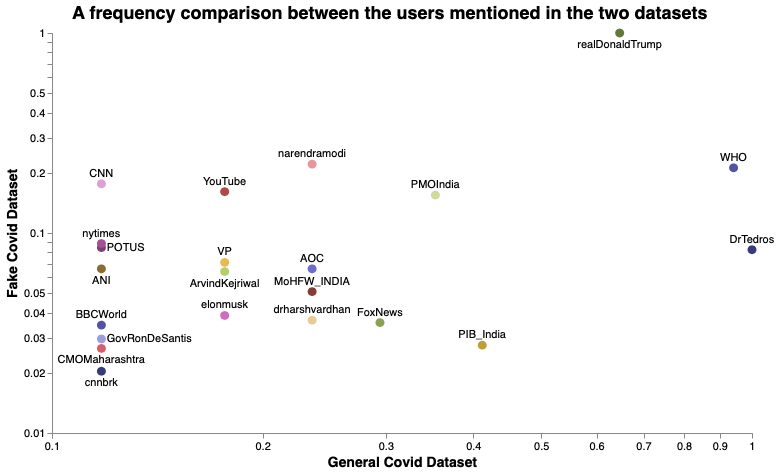

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042hhDhFCG0EUzUJOFltGicfbzc2bVkkTCQAzAhpEDtZWRiyNAEZNxpZejQAdgAGKpl4GjIsNAAWGpkkBkw2CBoALzg0bKRZLOTUtABtUHEkUMG2BkUAfTGUGWIkABsTTNQpkABZMPVdkAB1AAkAeTOABQAlK6yAcVNAre0AYTZiUrQqygARgqADZmtUBAAOSEAJgAzAIYQBOZqAuEyABiSAA1r5vr8RqgAVVAYCYSSQci4TCKkiqjCYc0AL5SUBHcThcSnS5XADKAFFNI8Xm9FB98X8iUDgWCIdD4YiUYDMTi8T9JcTSeTAZSkdTafTGSy2ccJNzrkt+Ys2DgBjJXuJ3psvurCQDSaDwVUobCEcjUSrcS6Cf9KDUKmTIXCqkiBBV4STmjCQcbDqauYM7DA2G5syLHWLnRK3dLPXLfYqAyAsUHi6GagIYzrmkiQSjG4CSZCBKn2ZzzVd+QdhfbReLXaGPbLvfK-UrA2qQ1KSV3qUi9ZC6fSqnCKr30wPNBiRyAHU7gxrS9OfQr-crq6qLyWapDAc0QSC4bGtRTkfuOScgwACKKAAKpEijdPm551qg941oul5VLCzSQuCMKNo2SI6j2rJpgBZqDAcDDiLycBQN84i6NBhZPpOMpejec5VghdHLju3otpur4gtUVQgqS-79oMnwAEK8gAcnAbiZKOBbjkuxJMZWU6MQubHEqiFQCICiIVC2LbIQiQmAegPI0Qpl5Kgx5YKuiD61hOUowqSr7JjSyJkkmu4mYR6DgZsSDiBQMygWwyTmBZRZOUps4qTZ3rqbBVS+RmWhXJ8UUaZQt7WWWM6wklMVhh+gLYc0770t2aLwqlpwSQ0WCbDEdqnmO0WKVejFxXeRWdTUnaAlGyIblu5JwimeF9qZIAAFIMMIDCfDAQVkJoomZXJMHFQVuWoglRQOYhbp1YM62bW18kdUhyl3gdfU3VxSI8XxAmAqd6AANI0MomC8jYSA0OYayXdt-W3Xl14Pc+HECE9L01G9H0gKJs23M0BxICtYoQFgYpZclYYQ-t+WHaxhMNk2YKtu2K5DbhJoEWlhwMAgTCA7cbDNVArVnrRhN7aptnQ-Wuk0gZdJRo20YCAz+HCegYoINiwyzATO3E0LiVHRpyPPD89wSEBcC8kFaiyaD-PFVrmsi8uyICHCukgrCMKvt6dJ7lNB6DAYWxARIWyyKBiiszg6uddePXWZCdvvd7TOnLNACKDA0JsCgRzd0ck1DOvJcjn1IGQnRIMRASkOINBZ8+mv3fnO1VK0FRwk7SLaQIIIvm+yMAKqfJ8SxXLoug0FANBbDX9Z16TdspQnCsgOITAQJgxBT8uM95+TjfN63ZUd13yE9wvM0csQDAhckG+xRWd2zw3-XbhNIICM9FQVJCNTN8jzBQGvl8grXy2lbcGOcbZz2RryZAihMCMlAsQXuV8QZ80srXcB9cd6KULqYR09ArgIEDjfImGCH5YI1MjZaDgui3BgDjQIxDdrMQgY-JCdNhrrjhJuGo41JqM0XmQAwZBcSbE2OYfwKD2rZRtuAyBp8-JyEUMkAkEBZjDGriAtB09SHb0fBTVuXdUKQlpFGaovEYTI1uAASVElif+y1yLYmIQdcB9lyEw0Ghw0aPCdx8PljNAKq0gpIE+AcJ4mjrroLvpDNSrCYavnfJ+b8ZJfxImRqnGggQ2CaAYHkLoyhJFXWykw+KZC9ExWRlJGSoRMCBDsRkRhW9YnuP+MjLYuhAjyF6M4lx0SWLlKfp4tc3jn5+OmgojJHI4CBXuGPewsg2CNJ0c0gZFD5HMxAvyZQUBRJbE2EsvpLCWlEkoWosU-IM7-zYIWHppNZFxNaes04BwYim22LIb4+yInZWYb05Mcj+EzQxGwAAHlUi2qDImhnvlHCszQ55hgRGCXS4JIQCUbBGDCyMAgzAWYoQhXRClg2zoczBqyTpPPmHgGwEKpEUyaRCBFA1VwjS4WNXxeskC-HEOCmwBzBZkscv1eGOpXqdnXJCZGyjSjs06DQVeSBDDUW+fS5ZjKHknMpegAAWgwTYyBPgMCgCRZgRLQEkoFWUoVazAUKJeWYTJDq0jfH5b8q1x1Hm2uZggHoYg8hmq0ZvNV2tjmaiTJ3AS5VKpu0RMjTQihuWyE+nAYQyg3CTxVdbO5hy3HkvrMiuGn90VVExWhZGjpcysyCnQewE9JCZrAaS91xT2HDLZT4iayMeayG2UsRZDaLVut0dailXrThWKot0cwEAljPF5KBCSrrSnDo9ZqsdgxVFV2SLIMgbAmDEKHd1WEIIAX+IUf9HAMBMlLDOOnUItKimqqbSultQzWXcNGcjcCbBnj2HHkgfkZA4ABqhUG59KyR2erPczW4QELhkEwM47Ngtc2QbXdBpO1zkjiENskB9xKSwyMOae8ZzMrEbHEEBBgxheZ0qzbClDTLRmv3fp-b+JbkaY1+tkpgCyl0wog6u+e670C3AOKJRgqR62W0DbfS1L6KatvfeyztWqQCbtgHAXoUA0i1OEBIYhucj25SY2+zhH7eF6xoP4OAOBbSUVqVY0C-GYnqtDWGb0VMWxtmaB2LsctSOnGIBIeQigM7mFMC5ozbm83sSws2Gmvn2EBZ9ugQ1OmaDsyi0c2LwmMODG+uPURbBdBsCcQOqJ8nBOvpZeZlTYzUsgGQBQZQPwsnZcFUJ5GFxEDhRoLofw6gOvNoLmpkCQFq3TP1qIoKtyGPMJI41-kDqZgomGwpipane5V1IEENg7cqg4EihV+iyGFsary4FwY0zAqKBLu1k7YGqsxbQ5dxrPalizWA+IUS3RrBzeM+d0NyMfU4E2DO3jGiZOgbk4el7XW1MffoMMeQtHH3FWe7tRbidgLPFuEsA4tx1vVdGyJ6sbA2CYHMEsHrwxmqOnw+ayrcOQ25Y82ZkZlm1NvNyaJTQRPHuw+XSTzbZOMn6oUMRKuxP4e6zU0B1e6glggeKQy1nr3kZ89uJBbl-6Zfq4R2TtIqjbBczHmjgjp35sqSY3vNuh9u7MjG-4bEbAuOu9+BRZ4+uya5eRhOgpPvseL17mcXZO7AiM9k11WyQO-dbbOJjPIjgAex5txdypnxNBHgp5gdmoig8Z7U0wBotTpOQtV8G33Gu1OzQADJHAzmYbM5e6ONsx9XoT7Pauc45WpidJcUja9MKowvwO1PPAYCkRAWwkD633YLkh4HZeKY5+2z9-eXCB8XyUgTK-G5r4s33sng-anIECisCgUAx-x7J1Yz4-IAAak-p-n5V0+jvweZqfDUdYBQzxnMd81dO85cydPhQIlhRJAgyBV5IIEAb9XsPM7cD5ZYj4ElkYQIXlcR7hgZW90d28WcQDV8e918ucycEAKNcRFBsRsxSAEDDd8t0AJJKcx4J4Z0rE51eR6DQDGCQAQJngJ4EBkBsA4AocK8P9CCmNeEWNjE2Mm4OM1N+QEB5Vrk0httSg0huDSdeD7UedZAX9alU9d95wi8ydtV2A05NAtDRdeD-AK0o8Ycl9P8LsPNpC35ZCv55CvYjcAJrBFBQ5VAhsgCq9TMSCj9VMydZo2A4BRJShItgjl8Ddsp4RKREQ4YoRGQ0J4wUscd0B7g3hjZFAoBsQcVrDsE1MVA7BakvlodK9EiiCbCrt0BcYGBsRAocAYhsQGAyi2FD96tus4AQVi4JADgrEejR1eDrBxAoiAgDgMQxQzB+1aiJDhd99yiydhAaAhDzBsQtjQgajxCNYQiXCagZYRVeJEZBI1MLg69f1qiDi29B1VikjtCmiQAYhSt8UUg5kkBgNEMEjnDx8ydnggJQIX8lEJ5PgaBfgHj8Cni98XjGjGtNBZgUTZBlDbh7AqdxjRYwiVNvDeCxMrgJ1-UD1nibwT0XCUUi1dIS1IxowUQ41lC-oVoYAcTlw0C3wPwvwdIUkLE1NPhYNpkr12TiQlM6sO0Gtci+DhSaBOZuYLcmcrdAd093MSRqQuE3YkRyQ4x6QwRJU1N1pbhwUjDbYTiyo4RUJkxoQvxOwuEXZkZtVPATSATJDzSW5SQu5NwBJoxLTPxkZ7gkBhAUheRsZkA69oTFTo8iNBZbcS19525UDHc40JIxjF8Yy49ED+JI03xo1qoNTOVS4EBf02Yr1FBRSPN4tqYfM-N6ZNc0ZmhjZNgRT0y-lMyu9JSZCP5PCf41MDg2As9Z02A0zljrY2zVS2dwx6SYw4wEw3xkxkYYh-VxAZhiBjtRyCDyTQiho21wipTF5rFRIlgSSJ5DMMzFQmVxYURJYERYYcjF4AA1AXDcy8ccu8VDDs0tBk2c6Mec+8maW0VrZPVIPIWgf4l85nLc0w3g-WYgfkXbBwuowEyc2Gc4sVeOMnB8seXYg4KAZNFc9-I4+or-BRJQnAHMQIW9UUuNXGeVGAXkfIGAOvKxB8-kCs5lHc5TSUxcijSIfVU0+5IE3gh8q4R-JYSiQRBQJYw4zchEho9Y3g0MpANwaYr7cQXYjMV0qCoSt4o4eVcCfw-rMeaitTOvZQeAcQHtdcmS+E1zREp+M456Z6UVS4jCyYlITARYWQGEdijCXzFCLIjCTzPUZGCM3ocSiyuAayx4yCuSki5mOwAIWYboRaDkKCLSuK6C3S4uBgAbZqNGEy8g8wNgWgdRKnYJcoVss7CcrMziiU5jfcgJeAY2HoAOURWEy3J7N0nS5EwMmgYQQIJYW4B8h8wq3gxwVQmmMat44M8eSypAeZQIPAzqoXTKtU5jdw7s9jAkt4pcutew+ncrCC7RYirKxrYfXQW4aZSnTQjKuy+Sm1XguvXTGgJYaa86g4fkegdgDowi2S+6+K04TQEvcwTQGAUIWQTQZqYhDveUQGwYWaJAYozGdi1CpyhGfiK4snKGzLJAdmZ4SCBgcOO66Ley3ovE7itTXQMRVwK9G0Otd66UzQfQOZT4ICC6Gy2KgG80lJHUKkGkOkBkJ3MnM4DEZ8zmk65CrMtG7iFyzGtyt43kPnXddeEmnLaWqs7zWmTxf8hRboeVcgRYDQkYKq63XqM66UoCFqXGICf6BgXoP62y0mh658MkFydcN+ZMF2ekCqYW3g8i7mU8xfWGwqE48U3vCI3gsSXkEEXkWpUgA4RmxeICICcFZqOg02lU82tU4EJ2HUZCVsNEHcd8OEDAoCE8rYSMpOmaQhJAcRXGVGtw1jHshQsnHtbGXGDYJRFaZapU5yQguGk4l+TauQu3ZGTYG0LTPdMUPFN6tWzrFtRy2Wi4+WzjIeTYCgXkb4JRB7Y6rq7S2-dysLNgVaaZMQmKyW7qw+t4roZACAHAEwYq1Gpe5ylepGNTLEbYxGhAaKuErm52+G9Afsi4DEM4Y8iScuqw4Oge0OtUzWxLWstJNTW4XkQcVGvoymsnaZJYOweVRu3xLs0e1uwkq4ICIcPkfB4e5u7a5GAATQWFAmYCjMcLfKVA-OkS9MLt9PfHhBcgNLJyAjx00AgBN3lPN3QYpo32xt7lAhWmKPeF-pWpj2MP6Vqt5t1H1EFqNAFLCUxmxjSDxkdsI1YdUY7OTHBFfk-n2laEVEaoUWHlHh5hKxkd8oIZHpbv0ksSBn8BgH1mBg6r7tWu5pzo9Pzu9KLr9NLrUxmAMEsqVj6xhpgZhARQZBjA-jfl4lREtKTCgX5CWEDP0zPpmGroUSgFuxiGsHgPnpGyROlM+CuFEitAgBVjyBKeZk+GeHqdEkBDadODZs+BVorM7FpCTHbj9EtJcjseZkNk0wkbqojqmdODryJrgGBQ5Fm2qY2wUreIuAOFTk8B+08F6ZEmzAYB7tDOhLFGEFRoEhjHblbFblaDdv5LAPMGUE2EDOQEvW6CMeVLT2zsnJ-D5r1AFsND9reMxL1SLgoDmE2ZFyfibo8Joa2y3oEuIzDowakajoWA5GKt0Drygb3qCYAbDpfoxvfswoxHThUFmbhbWMereO1R7S5VXmCwOE+mOeaIgHEGV3LLpbJomLeKvWQHWZLwgHTXYtzs9ILp9OLv9Nr2NJR1+f3rWpQoSW5OSW1F1H91CXuDIbrwuBHIlpVeCcBckfGh2sa1GKPIrslfNZ3EtelPaOYG5ngC2EqqJacKvultufXFpE-EtJJAZBeZ0KQF6F6C5lMBoHmmamkovqlHPIBZrzJzUC6BWGmQoAWTQk5ZAE+nMGNlUBK35BNs9ZUfVo7PDtIOP3GtWhWl+A7rZP5ZdvrA2uoa8MsVAisSWBdNLeAKZTFn0mvKMmlm9F1uZgMAfqYG5klb0glmHbvM1w2gxGgP8DOC2AbqbakLcbbd7LJ1xU8AQBWhoxzYmxUu7ekkQpWNVelsxbIN4JmGBmSEWBwCOuNeJfLZ4LeIkmGAPcuvsCRpWhzc0Adt6F5AixLbfa9YPuTcUtmG+D1QM03YtsXguAFAjIzs9cTZMJzvtZ8jUzFE6E3WDPMAEhzbUAJRgGpxLiEJzZmJiMCl6Bo16A5vjffYXteMazIiChDlMHkBzdmVgDrxzEUEUcCag+vYrbJblopd4MT1ElTovZzcBmUEsonhiFRvVaSV5K1b-EUO2TCgDo065K06Be1cNIIvBxKysUTqQ56stsCDgDaIopzbjrgFIAxCAkJcg7LfY8bik7fqxtg7iaQGgToBgGBRBTma8SrcjreIjZsCWH8DRdjLDvgZrOS0oU+Akgf3uEAN7eOLs8XiUtCEQHBEtJbm9BzaOGIG2EwB-wvjEDIG2EoY-HceRbJwaiAwKVgpufFXuYDaeeDbjS5AUCWH0BzcHwhKRuhPTiQzNrYcAZAFNi3WGE+AbxzdAiAQkEDNIFMGVbY5qcGVw8WbOkssjwkCgF0AX3y9OsK5mgsta1EUjJ+n2-E9NZg7eKuE0AkkXVs8BYZDKljG1I-C-kZAqk4yCUCjrw5b+4+8a3yJwF+yYCYHMHuB8aq9rSQF2VgR+hsDjb-svug4rewmrO1tXCibJ2TVEVwMdHlPB167uf9ceaDYZCgXjtMDeV6C3zIB6dh4YLeNxCKZgP0DTgaT58-eRP-nUHBURsi-F8U0Ra2vbfly5jyAUA6BU5zbcGEBBUwGaBzf0xgHEEgi3wyAi9RrS7J7rLGyCl5B025Xx6UZ88O7YV9f6+Z+eeRmpunXeaChVl7uj2d62YZfOquFAl7i4Mzv+ew8nLQkRDRDQm1OMR1CQbALE1ZnZjlLNx5mS-bJq3mZi5O-QDSGGBzEBh6ElfUf5oNCFowMDk2FkFmhDjDlmj5Zu6lo7M7kdw1e0+RjXf1SxKOBBTHkd7E6D-hZD+lIOFoq7tmHhBs-b+9f58awfLSG-Zxi2J7pzeYK7vNhza4EdDiLCzgAkD+Hl4P2O84zHhN-YAQCtoV3Asg6w9MYl8ttmGxFwKHlCAoBzYuFQ566j5lsmMmnHkqZ105k5e4DUcQLa3P7bNGsj7LlHpgMYlAWuhDDxl+iDJLlAguyMgD-1gFsISeWtJLEMgp68FgsIKfTJXEzj4DBWjWcgUsGoGL8ier-IrmbFerrRNAW9TQHXii67l+iamK4LAj4BLBQuHrbzn22Q411A4q8QIOwHuBVdPAigGZuwBzbkDxALBf9DOkYHiCCu19RrMIHBy1JyA+-IKJpl6DyBNgfsAJtGRMbwQ9B0pKIndjgBMAGAQxPjjQKgxvEraavRQJjHlRdAc2nMPVDEG1A+UPB6GCFsswWTNNROgfCQXdwUQYgxEsyULM8FmgTcOgE9eVEsGsGOFx+9LWgdKUDI0ZNgv6QygsnmI5tlCoiLJCPFYLTIc2v6KAOPDYCiQc21gURD-lgQSBEaJEZhkhSX4sDv8gQUgB0DBSIcmBEnIYQol-QT0GAhsNQBt22TYg7A2kbfp80vS6BH+rHN7iSwSHMxMAkEDojpk2BLAmAbAWIXkPiH2DF4AhDOBkF6EM59YQHXGCUCrifRloCwFwJcOkS2CmMX5GcvGF-JJgi+IAepg+SsQKcZIokcwNa0lZ6grSLsKMNhB3Bop+G-tbPhPHkDIAe0Z-SYe92X5M0JcGhW4PjhzYuBd0q5dOIFHHiXsiKHffPtFz3LIxrqtoXoA-UCCpA6R-1PYTcJmiyA7MzUZVPiN5Fw9pSUxXdKvFH5xDdBYoorhcIOA4jlAFAXIQMOYEcc6m6vRQD-gb5ZIA+Vw2UYSMXgQ12Aaga-OELexM0fo1RTrrINe75CBWLbW9tW10oLoJI3uC0d3gL7MiJ8E9M4Ncgb68CuKWLN4sXDFAB1xGFo-3MkCuB5Bgo9o64XKJmjapiuEAEiAmMNHTDpmgMQKLGPyAZjbuKFRXkQ0dYHkOgmMVIO0RzZWJQ4IKLmJ-BzYaFYEaKKoXQGax7pqxwUZQLIE+xI0aM3Ip2h+2ILej+BbdVwJBDoD2Fn6nEdGtJ0C5vES4q8VIMFhyFbECxDIjUYvAki0NYKhqPHkMxLQohkQLcREBMx1DIxswyQV3HnhzbTJ5A6g-+IsGKZRj8OUAY3uomlEGjCxSYhRKohe79AN2IoocRfxHGYMdCVwC4ATgkC7pmo64wYZuJmhQAEAsgGANdx0HfijR93YDJsHoAq0OgObT6J9EJydArmddOCeqJAlMjRxOhG4rehEJt90JG42povHvrXI4AYSC4KgLa7K8ycJuE+irW2EE8TWoozCQomULiA3WOEo3t0hfEddtU4lfwLfQHH-1gJcA6UlS02IE4rgGILzjsIdHNsIhjWcSZJPoDjwNuPdOAFCSpxiMc+nojilRLAlvFZkIUNgPyF5DJwc2-osLLIF2TqV2hdAPoGEFVpATfOakrcd8QkCiQ-YGlAoHZNbZIseJvBT6PAmClP8-hYdYsegLUz6YnxbAHBsoFwIqwc2HnTQATlCTn0hJB3YPoUMXgcSlg+FYGIk3JKD0cOoE5+KWJmgNS58bWRQOoKCCeTrgXUmGvdTijwoMWl-ZBkBF7hNlIyInIMfVTvaK1yKuIe+ud3ED6wYeIUl3jVKBR7dNg1gb9i0JmCqir2BIrMc8iCgmBAoXQ0IM+K2nVTPBjWbMGKAwg5txA5gcjtoJ2HP87BWZaEG-C9Dvg0ITsD+CGzeLSpZAMwdmP4U-Fqiphw4hySGMay7EFiuMZSvNIWZtIM4w-MQD3QZpxTnRsXSXvkiTx1sNm90ifjtIUSaANCOGWYYFEaAMICZE0yIkFDgD6xwoeyCdKvAxmF9kYJeGSRTIKGPTpSkENGVDPZjKS-mQAyQQoigJhYYgEkNokBxcCbAuhqQRqbJKerpjNAq-XUVLOEmqTJ+AiJvMkHOEO0c2yQEuHQB+BBwvplU3YUbKpnMwdM1QtgFMWTwG8p8xvPdJyNtl3Yc2-Ie+jEB+aBk8gsM06SJPOmDB00tFYKF0HEDkUeZdkt3kz0Dae81MzBM0WwS6FI0uYObERH0HxT79-0VTIWY6PYiEzQR80ZAGzNvRPdZgBsqqZTKdEszeC2I92WKAsDqC3AqNAEbGCBGJgFyplSMs9TcAwDy5BksUlXORizQ2amgQ4bpgjn0j4JzEmaJiSrjYhXwxUs2GkGQBLBYwIIdoTYHZhqAwgcAFyBtwYDAxNu+ouGWdIQkKJbgiwJAATkyQnSV5FEo7m1MWmcdyInMWwCf3YrIFEyXfY+GO1OAwI-CzAFQXZL-KlQo0XcGNGDORID9BEeUwcJoG1ACB9+Fw3QBYJU5TFyRfxZQFz3IiBAxQaEvSYmNEnMxBBJeVIMWynxKJl5PIp2SLMXgRj-0HSULBmknmLcxMbk8WtQszGPyYMmI1+VCRhI5tPgGIL7m0K1m6VbgGIIas8HkHMyf5LoxrCrSWrdBia-C2WczAnrsxoi9w7ZKwsHGhTjZM0bYP+nUFkS75kc9hYZOlI4jpkohR0DSOaYWKVJVi52acH0zm4VoIjaZCK0cWfz4ZjcTKe114JJCuU7AK2uoP8mQRd096HNvACuRBAdM+eDOAxJEUYTo56AOxMEsNj6Ym5jsvxRwpmhcZ5UJw7VHjVnw5slgyhAwBPHOH+FbqBi-YacFgpnAr0mAUIHkodn6T+2APD2sD29pg9wWjWZaKzGmRhR-C9sp3jQsZF8DHJjWRwUBnIxBQrgwcu6YxNXlhSZoehHURVOWWiK151M3JbUmW41ofo-QpxZUpcUCIFgu2R0LdMwDHhc+NVWhacH0CmDIgKgCerzJ9Fk4oCHQDYAwCWBQ1ORDyiJQ-MuXtMzQohcHA+QuHFwllY-FZWItOChk4AxscePIAgDPAMQRrfJUxKOXnotguSYtjYEGK-9e4YmH-HkEFkHKv51ihRCHCRpRVEua8VsVyA6DuDMO1Vd8ot0YbyNtR9gSzuErYVPLNQGpWEJuB1LVBzG6IxWooF2SwBYA5MtKSKpj7S1oliUr9t91Km3BNAoEK4HXjYqKK6BNAFWKvBWjYgDALwq9LjD1YKBwarRRtl0r5EKJAytFWQFYlxE9BdIJg8QMIHbi88fVP4mDBcDyatFJWCqrUsqr1KoRKkqHZbE1yASStw0CC3Mkgu7AoLpSFwKfB4DOVYqLl38xGb-OlJAZ1ByhHTEsFUTdEbV0pWhPii4zVjNACAXkLkjLIvJcY+MVtYvEulihhEBjYGDgHjDTi4Ys4gLgrSMlwAsAWMIKKog-myrtprczRUTOlKXSmAdbHoBJPImRKEW27BKbu14JXADgvIaFSzWPbDqa6MQfwQ50qayBWV5Kw5RyuzHpx7UE8tlSeoIEJZ0uJA5GPFzOHAYhl5ygpYpn7k-kh5oIkCNqg8DNQDgNBQKa4yobnqS00y6UqmT5CcSH1CifplbQMCZLJWoTThrK0ibIx+QGIZbBoLYKBzZAXGTAEuxzaxEBypqLEF8W+VJtflIkGwCRGNpJ5uxMikvvkT4X-qEVlK5mJ9FuCfRe4OAMYJiplHQbEVpwOTXJuz4XyXO8AL4lyC4ywAwh0a-jVoBwk9spNUcxTP53QpxpzNF7O3o6lskmbClIAKGpgHBQXA9q1YysbCJ0lVcYg-IKYjYCDouacVRECQLUnHj5JYFmHdKetRnlqYQUywYDMnLi16qX+4WpgqhwTVxSQBmrVJJQguC9xfsO9MYRN27FJUiiMAKAKlI-Xsr-FgwKxAgAWKfQe6twTtsAt3DQghoLceMNUGMQIbfBHlXCurMo4grqJbxM+mkBcCWVwoPiwngBsa3oAYE-WBYoIgN4KB-AY6tOIsvMn4qPVEmHEIJKg0Uq2Ehqi9QL3TGbAVYLWpANCAZ5+sHm6cobmplqT+FzAvibUhjwKQEUoaugY9dJq-XPIFgM6VICPDhUbqHpzymaBxvyJndINFatTTJtOCyM4Az1GbGlX0WWbnF08tuQLwMZIBdAu4HSFV0UmKoD2RwdNIsMI3MxVEV6dmJjGajYhWwFQKoX+le62D2GCMtZUjLqbUI60C2w2XKtcJnqlel2mZRkuxDgpxugAs0t0sGAJziqJWKoXqlOYBAXOfhDomaGIjNkhdzc4WTDvsbXqCcau0HZDssWbqjd7TVzl1xditjNMGcWrr0G9U465VoVToL0AWGYACwt4ieuIAQAu45uWdBbkPTRSthHYoIT+OSA-g7rk6R-QMgsBwk5tlm2wC4Mbh1X1altVShRGcG+4RTjp4JCDlnqB3LaQAxcBnC4N6DmAZVlu6HZaMXhhz2A2qfkBAQkj8gzgkfMLepuAgqLM1LUSPLxv1Wmal4XKLYE2pGGRj0t83TLZRN501rF4FQY8lREgK17fFVuhvevOYBXUmZ3elHYMAj7xof6qNEBQ7mPg4bF4QQPZAoCEKc74tvqjZM8C81oyy5uqmfb9IraW9iB-mDAooE0AoTZguyLLLTtOA9zvq3LRTnAoRHHobSKI+0mquRLnDOgtCewMgAuAoMlOaVKuCVU6AUKVNX4s7a7STVKrvQKq-UsjHmLkQeYIcEfhPWUA5sMkCABZWKDlKBRaOz1NmEFAX5u6N9bSKGb1LxrGUQDTW22jWOmTZrhDaWXuJBO3qvsS9VmnvegDyAP1UgR0g4LcSA5sw9UAKiSJwOrEOAYANM7UdcjwAESJINOPRTWnXV16W51uoGn7G2zZJDKQxHTFUO6BiBylIywxacAgDUE2CoQk9iovqZd6eD9evuJ9GNi6AoiT4yTfIdx1MlAgmgHTLICuqyBPD2KufcGIX0zRqOSAEFJSJkVIgJImJHbXXX8lqB+g58XEO9MB0KGn4sGwefOVBGfQNoy0IKJ4qjWhHbDm+hRJ9CHD3Au2Q0jRdWq0XSlPoEkSCdmGDmVjg90fLJot2TQ+pX5QxvfcDsGBN6ByAUyoxiG4NxH3dE+eANgDYAbHNwOC4Y-PtGOX6PxyAOirUfiMCl2aKxt-SHtn1VqLjcemaLdqNpwBOjex3g9cS0yOd35AhW7SXhzaQD78tGp499Pv0xrTgUU4DDFPBR9GyO829QdnM6VdHDdPR5mJoFSqpAPlD5OvCx2GUZH996AZ4A+U0BahGhVJzdDWhO1I7CDOe5mHoWflTs5kQc9nQ3xtkuDgVkhpbtSuY3DBRNApzQB9Lym8gMQBG1Y2Xt3RMBhAzQ1-X8bCPc4ugiPBDukcrVrH0A80dZvyBBQiDq026WjiRFSCWg5esplk7isCAbG6Q7Q3eUwAKT4H75dR8mtutBE-Ndi8gTAA7X5CzRKTjYxYF0VEQtqrTdhwYPyF7jiUbAyhERkEXDNilCBCDVtKQLeKaACKCqf9ITgm3rKHB1aHmOnpCjGasTFcnExdJE6zAesh-NfYttL1bqRjHx6mYMpH7GwCaYbULaWankg4gE1h9faqbAKQT40da2pGnD7N1m3Tcp65N4trPC6N9SBeMvbiTLn7usy7ULLQdyWYmVT3RrGYMRL7vIug45ucwOd4LCBA98Zo8wbrLNdp7AbAeEPrwFMqwwsyVOraSe1Nl6r0yQDemwBMmu7tz2Jr9HuYgC21UOXEndsQzeKLHTAK0gY0B2UDTJ-oukaoBGBJCNiuxMqMUMFlDh9AxNx9CAA+XeBWCZFP3Ifa8dfKghgQwzI8WM1PFdoVyTpuQw7J+mXkxdJYi-bDo2heTAxcuwSpOT9K8NgQ2pZMPxGB5QJyIwHewH3OnIDy5yIImjYMqDiGwS8XICYV2aYw2bXKliIKL0BoDAoSIYwBM2pe8ODAN5Olw-WTuxAeAgMelyyhNx+BOn9+5EGwMQHNGJm+D-ga+TiGCXAG3L3ONRByBWg4BKFjAEs-+evMf1uV5wsrJXx04gsa+2jMnOzEWJBX1QTqHNlhVUTDnjg+ysK92YFKBRckE8ITmyNzN87F44Kq2sP0ZOqbmTEZlbVAHFYHMoqWp5HTqb4IE1MkuMGYIxdO2fqy9TquijMHECvnerDW604MGeBXBbgdeYDKFgw2tdwLnjbnKYE+CBR7lnwaZBXwFMHA-9llcwBJF3R2tt1HU0pjgGQB6bgQLnVwLUmepUK3zrVsvZsE2IGAqtsATXU5vYnFwOzjoGdWhU0sCkbsG10RMPhEZkctiUlUeKpzuMi6fazQL8NhG7AGIm40IE68zD2rfE0lAprAKBA8CuAWrtV4kBduw3Ixgyni9orWhnS0dUOtwGQ6BYFPKd7CWwTkfjb6uixZ2Q7KWAuzUwrCbQgV20FXGCiU3Bcl5dIgFXQiYQYwaZxrAoArRCifjN8bco2dBGkjI8VceRtiWFth0Gjsl4ecCQaZ+98ggZWpE3MVvvHQRzTGIO9MaDdBqrMOU21kcuNNU4AVwd6SCkxJiDWO9thaY7YUTp7REklSjAYF7ma2Et+OxrAHCgAE4oAuupvArfGkenHSjnOAEfv6r66vbmMgUoFZFa8hyKsCE2-HaVvIwnzE9EKHPSJbp2+ZamInZBECiWU+VIdlColrBWt64761Im6jfhM0j-esgMiCCnMCgRRqDdm9mHbbUMckAFQTbk3g820MSTK1Cu6CsJJlZes607JHZgJat3G7I9gRP4DOGKBhRb7ee5NroFcB2j+3Q+3maK417o7iwQPSpxgIb3h7CdxHKHDEBEIh7FbJu7wTrQl5FlBed+y2nbunIDAqcSulTm+A0d-7POh202eZi0MlatiXuKMVoa6TKp59sqzNAGwIBMHmDuEA-ck4zjl6tmtTGFDYB2JIgeD1ZdA+Vth8I+FDrLSAFjlXp45EgJObbY0hiqVo5N+gOYCpb6p87bd1i1lLJz9ltV9DQwpA8yPe2YHpwXENOhWgqU6HkjjO2Tjrzap2zCOlPBI7eNUPx66cAGGaMUfaOpH5txgJweaX2AergTNB9kfPS83r0-ZV3Ht0MdsINLq9RQhiAxB216AzNbZGfYymCOYlcXS6TgF0A4MUgrWMXuXYLtm3OMyD7Ls45hiAO1MkQBAENYoBkAJWWjthKfuXPoEBSbzdOJ8yQDfNR8WTsvVESN4XAbQgFBVMXtQfROdHxebYAgCgDV6uQRUspw2Zidvbswd9FWC1DONRO1S-lTIuLeCrNgv0eqMRKBEqLmAZimSBJ108adk4YpAQHtAoAg1vXOnlcrezNCULpxzA22JA7Ze2d46n7HXTgZoH5BYk-z9T9aq45k5vEXBvUxitckgiI7ZM1jn28zFvRcgE5EZYKIs52fnPeCmAXXhICnGnOvRhd4h4-ggKhA2Yg+qF8dw-Bfo4XZwxqHQCBdikv9tZbsJriWqZJluoWfh2zk7BGITEu4fiPGBjAIHpSvIGEKJCkjuBrkljz5w0+Mcsj00iy2c7UBOIUvnoVL8xGk20hQIUg3QK9EkMqK76D7YdfLdp0K1qYHykIUSAx3yDYvoX3TsnNCsF6Hs66Lp5KF8+keK7xxAHEORq-slaveCUUunFFVmhG9uWFrytgvfTNN94AmMcQMtHTh1O57qXLzCmZ1qUJGAxRQEBECdepzntg3VnmphhDAonBmAXuKS59Z9c05UbotY3uwpLAb0kl5F+M9J7f7reZOXkMYHsAxFSgDOJNxWwjcDcWe6bmaF9l-uP4eBub6tx71e1k5KDSdsLuG5TeRva3ffCnGkfgA9iyob4Ht4zz7cZywVbzM0BNCqDjuntNbqd0lLVslFUgtockJVxbe9ul37b3gqBCZ0UWF37vF7dG-IJ2qo2bnC3W6CYytvT3dbhRAHGOkpGvQx6J2Me9Tf9va8vxenEsE27mA6DH7yd3u7eJWIgoXrsQPxVze4uMuPTopnAGaAsunXOTsBXk+Ef2AQUIrBEE65g+BviHXcuANCqfJAfd3Z73glUEpzU5MYrl2V+tVw8-61MCqWpCVh8AVpzAvxu5yhTvdpvkYWbqKSfVkDppqcZd2j0WICdGrzqBgbVO9KgCUgOPvr+5wQ9fpEOOuOxd7ZWbrtigfhhrv18meA0MeycuXOunQYZBRgnXDz+cY1hf2ZJsQbO7dxO9I8PvmYX2K2vrDrzLMDgqF3N0k+EdjwVo0yAGTVG3n2fF3bbsj28SE7dA4AURGID7u08xRb3O7sL058gU-sUei0TPZx4NXieJd0pdEsQCWDkcnXPn2JVjC2LcyX5Zga9-8CYz0fC3vBDM3r1RCQgSPyX5GHF7JCWl5PVj-x5hvF0QXtFZWVdwqltDmelP5LSz9KTwRNr2evLxLw57a-4csYt+2gMUVa-3uWRFthkIM9E8a1-X+n+r28QRPYBZon0apw0Nzfa3gRutqOpoGjNvwxvs6wh-9cM++zYEvIEo-Km6-sv1q3Hr9+h+KIQAY2jqdbzx7UxQAXr-N4rzl4G-SkcAKwCeL0G3E4f9vVvfF4x8rH04yADA0H-994Il4yA+xFH3p7R8QLBg5woYpZUvneeYfHdwYMuWKctRkgNQJ15-beINr4ANQmIEwDaI17WfuzhRMrnoBwgcrWXj+wL+Zjt0uY96VuPz5BdOTlKcda5PF8Uj9tc1OZCqAWtjQf1IgPgfkCPEU3fe7bHL5R7wQWqQRw1whar0SCNfVy9i+bNiaGRzBy+YXKz5HJsFMO5u2fjWZ4IFFkDToFFQzlCnV-R8dvVCCAEo45xgB2eg-j91309X5DPB+QEDIULQyuDuiXfVrt4rE2V0cgu5bL436Hfl+NYOk0yEFKtP-SXnbfUCQBG-I5CZ-ln+PoKOzHnde+JfpwbGPeKJq2hxHsf-B09+U8veYKBgVILIxIjc8LXhMun0Az883YYiuvD54X83vF-pSCQHMBTgGgN-OXteH8+ID5BTPoSQUCaND768lioE1gbAP2UMqOAczyLuG5-FfDGJdwNIZCKCBBwrR04F8o3+w5N+V278EAQKAQBZkcNj8cBHU-yEd93eACGpebc70X8f-RTwH8JvBdWlIXAT4kI9A9Gj09tf-F1ytYPKQMigAaMNhx08i-ePzeI0xLJGUsIAcwGIA4A4gLE9wAwJ1wDcBTJGTQXrKLXLUfvZf1IDGsNIBwAIffeywCSArP3DsuUGIkggVKWhgOAs8Lf1N8jvKNlSB6lI3hkC--XgjKxdiBDxa82-Ff0XhIgNXk4dNgTvV2MxfSh239MKeVDoAbXe8QTllAnAPpd5OTQDsxS3Kv2wCj7IoWwkaAUCEFAdQGwNcDapO1VnxwwcMB8CL7deQUBMARGjW8tA7gOlId7AOmcCwAhayw1p-c4HdsInUK2MCoHUwN4IqMApF+AyAJS05Fgg9BwURkgIYk2BZ+BZDKgigmx2ZgIyVRERoybOAHt0og4QLGNp8EtXEAWwRECTBaQaoO+cgaOJmkhhzW5wU8uA1oMXgwPBAChpNgK4E6Bh4SfGVMMgpRxUC3iAmnIBlfWaD9tNgb-zoDsvBgIk86mYJGXJrAYgA6QOkPoONc0sSGQfIIALEGgB5URYNGC9gxIP69kguvBr0q4dxTgAdvQQLGDG-bPz3QYgJYFxAfXHrwQC-rNx3Q9VvFWFKFHvCEMecS-BYh5gIAWFj78TA2QMaxvoDkAYBcHFoP+DGsZqBwl04LrkJCT-F4LP8J8AwEc4sKGKUfwLg6uW+xM1aZA-gY-Xb3F9tAmaAEJgoQal5AZgeH1JB6Q2eQuEyhcQDbhDIFsEFC1MfIlkAQIYYnEAkhdjyRBJ-XDmSDYiMgFkAJIEazBC-grILeI8pVbXaNrfPlyED8QtwMllswUwA6QcJHYIS8XAkIIURhAbEGEAclXoFZDfguP3GCZofIl9Q1AYKCsRK3dEJWCeA+OUK8xZIgNtDfvJLw28+yKxHnR+Qe4AJYHyG0NV87Q4oOZguVWwAnRbgT5FACdQjEOlI1g8wASBNgfQFfh6GagklDWZAW1swzcAxzxDdQxrCgIDtMHFUIp2HTXrD8wxeBcFzAbsNcMOwoMKn4-PH9wh8UcNgG8CaffYNy9k6evn0JuYKgkrD8ffrF0BkASILRDMgzsNh1TAMWTIg7sWLTZDAw2wMXhk0blExJegV2AXDwZUQKdMcwcQFlhZYC8M45swQKH7IIAZMI1B1LcbznFkAxeGNRjbQYhncXBbAADD1wgcMXgF5MQB0x-Q0on7DDwmaDgBrQBZE2AyVJYKMcNwh0OiIewiDW7AHw6UjR0pIRqHaVswcKBwiwI37TnwFiIVX3DFMEnwLcowKWzGMCcP9zFAt+GCN8CvQyIDdZ5AdEkCBYAN8JvdUwmoNOAEePHiVgjQ6vz7IuYMRFwpk0YOzXColWn1nlPgMWTEBdsEiOOVjAVuEMA1IuWVaU88LEgs13QsxlFtRnbImCp6IxeHAN5UTYjIAGcEYO1CPQ00MXgIZOIKRpsQcEG0jmYYMlxB13QCg1c0QMEE7gXIIaDJBKQFuCFCZgGACtp76FIC2c5Ihyk-D51cKKxh8iVJzNgPI+qHAJaGbUE0C4o902iDF4GZzsxCLcwFb1A-KiPkjJw2Hy3E9uRoCL18ZXKMScFIt7X8A2DViPtDmYCm0CtcedKPJ9swJriXV7ANGR6j0AcRAkkAAmgEtNyo1CNAj15MWXHhOgNNlmgm+GUymi8oz0IURVyTwFkAyoD8GGiQAfTCQA8pFWBV93wgSP6DBgPFXThZgMqEdhUIMdzai0w3FQzgw2E2DmFGgPaINMgrBQAgAdwzqz2iAAhYGtsV4EYRldDIg8LYiFELfBKIyyQj3ToxIs6MuDc2LYmDJ70ETzBiQI2CIURvqWBHMAYQawDNM-oh6MEjgIUQIwgaXVoHSCng9kPyiZoKGiCgqnTYH8pkLVsA+iI-TwCLhzAUED2ioonFEwAaxOij2jOYXdCqJ3tRwCTB-ozylyAIAbUD4iavBGNBEWNGIB-x85ImPOj-IGd0dABCMLC5jVYxGK45xAGZwvlsIIujjA9og4E2ILkWNmwA9o9wE8AMgJYEWhKI9GOWDMY5mDVDXgC+VBBcwhyIbCiRIKEti9QIS0jQ9ojoVZgyoFsV1jQRW+0vRcY-iE7g4bSmPsjqY9aOZgp2HYGKdAKWWJt95YrtFZdzAPTXhiTQ32KK5vsXQDdZFALOONC8wmaIUQJ6bVS3wRWSuPEiO3BYldwdw44TTsc42vE+xEQPaO0MUJBgXuU9opsNEgM+enD2iwobYknwDEN2DjiPotgBiBOYWbkjjkYDwBkFepXewClAJVaI8R2-EyxSAUCNdmwATo-iKLi0IunRmBcBVRAoB1OFeMNIWoGIEKI5pO+LMCqvDkBRCwuDUmHjk-MKFyBEQaEFjAWfF+N4IKgEtXux0TPaJvixZaoD2jAYR0H0AbAULGfiGopZ2LiZofmLdVIgY2BhIdYlBOBcaYhRCARWPXMDSAiaSBPsBzABZAA9QYlCLWjHImaG5cOTYKA6II8VS2djpo12NOAfoOimURvg3ELwSznAhNqCT+VfhnonzJ1yu94Ndr1dVcbJ1V78d41BPPihIzwI2Mm43r3JCIA7KnjFVrSnCYdYpARM1d6EhRCNQFTPaPoYGARhhcBsXXR3e09kadBKwFnYBK-YnLDOF-ROzdhLoS0E89HZ5J8MILhC51FT14IrBJ9yDhm+WwGsSP6OvBocQjDxNdp1fUd018qobXxPwtgawBXg9omYACBSuWWAfMDEy1yMTvUewFODK6PaMghzAHmGKoSIfRIUT8ElOJkdS3R0GzBkNeIOrjOEwYDrxeQXuFKxKcHJTNjzAfjx8BFAK2nDY9opSIpwQQidEOEJ4Q6ycTcA5pkiAD3YeIaAyAX7FBtkXakChBX4KECbhUIOOJPheJUoGxh6AJtUYA2ib2LMZB2QyE5sZYMn3QA8VI3gWpQOJh0LiUKCz2-DNw-IDeQRWNrUy8qY4pHMZQQOMDQhSQGxmRBlbZSiCgi4MRF+Sk44pAHY52a5NHYsZbYHsBUqfxOe9IQnQkGwoAWRn8syQtAUYD6XW0FVBFAK6gnotrPJLbBGQMEARA4+FyC4Rbk9TBoBDAQwD8TZkqb0pxrkCwggArQ1qLyTnXCGPTDyII3jmRwcNGNoTd4jkLtRydTTEnjj9dlMXhI2XAVVkfgM2P8A0xZ+WDI9os+gdoXAaEG9pdQPaMKZ9MTJJDi6VHwB0sfrBVJmgp2Eqm1V6JWBJ-onOFwW1VaAiMMBYNGUFiFodwMmL1g2AeUlhFXAfFO4kpwmaHUJakdEifV4xFpOeCCUg4MXhDAFIH-YfoIT2AiXYwVNS8ZgH6FztwwlMLPia49MK2ASiajyYdzkgByaiycNHQfI9UHTFIhqVeRNiTFEgtNS9sAeADcBBlHmDdS80+gI0TCU8q1+1RaG2xoS-kjGIzTgIP2HEktkETgmwT4uWPzS2koBkx54QR-1pcJY+wAoAotWMwkN+U7313URWVYDsx1Xa1MISNHCQDK05vLuLJxBCWAAcBHYoDGDTFrK-m1UELHuhKI9orYj8JLbRAHIgH0pIJr9DQm1xIgzY-IG-ZRkkiAFtGgODjNwL0+dLHT-IGwGzAioxQEQy00jhLgyQARAGQB2YZoRuxMkeg2PS6dUtOBgYAWQEwCJUptIXTy9bGXlR1A8QFjsCM04DxoS4AZRhTOAn2KUTBgW0VOFuNDFSdcaIvF1bgv0KANuBtgMgDIgk7LtNOjYM9qL6Y6EeVCoxuQthPIzakgpKWYFgWJmsAYVSaMbSVMrxLp16+XGlUQC-eANaT0MkcIaAmAFyETi2MithK8vBeJX0JZgF5PYzm0wYFRh0YPRn-ZcYReQiT0PBNGwYPHRqATcYk5TMES6kwYBu0zYfdXmR00a5gYzBgblFcAaABIGoJUMzxI4zi+H+lkBrQNZJ3S94oBmmQDgc4WQBuY0JTgSsQVSPiymCc1XCR+Ut5K-QVOZwSVhoIvLKlTmYdPUUBNiP6CDJSbI1JHwpRHCVMAJ-KrJABtxMiBmB8kWZF2wy0hXgrT72d-nGSIAdmBR5h4jWPLDjM3YKrcowsHyvSMzQRHMBOYIoiJoWoM2PT84w+4F5AppcSE8DhFULMMS9M+E17g+jbVFJV29bVDy4aksLNUzBgVUG6BxUkdPTSZMwYEdCAPEFEo4nYu7PySHs8n2NwX7OyJszwYoHPQASsRxgnhwcP+CUyActDKRyUYPdBR4GKcoMGo9ohAGEAchI5gnDe0+NOOUOeIBCRc8k3cF4hYQEtBbg9QEtDhg2kERCvcYM0zJxy2ibECgBN3JUJGz3glcnEoUgCADR4M4YnMUkJ6UgB0wMgGTz2jlmCwGWYf8SJ0+z7sjLJABacKSS6FCPK6nVydMr7Ohz0AeAGxBsQXQAGo-7VrKETTgOJznRAQTaQ1yocrXIB0XUlID2iBRXJA2BZ07OOkzHokSHaRrkeJwpy400NL9UJAb6Ce5BbUZOzAOhafAWQhCZzOTjvs9ADKVbMGABqdMc2FNHScciTU2AopOgFY0SUvaKuc3ANgKx9S8jvQkAF0D7KNyPMerLUwJ6anluwRONRP9ziY9AC-AjMl+TTE0syVNtzyfUFBRyglZgEBcRs0SFAgb1dwFzSpMsl24ZKQakEEsGQLuFBFAQUrGKwPAXqU5lQQhHNzyA8pQ1EC8acQKtSbc8LOL4bIrTEIQ9o3kA-4c7a5AyADIyHLAE4rLRnYs7UNgHoYRGZBOdyBUnHJBsCmYpxxBSnOrISjAkr9guBPoM4CuAEwoCHPYZIX9NeDsUEiHSAAgMrEcSz81PLmhvZITlIAIAb4FXDf83dJYko2a5CWB1Bc4X99rMpf1jSQ0qqJmgNZOgzO5WMmgpTyTc-aNtll4M5hmzAcg-JAA0dBeRgB7hMeHXsRszoGSBYmHguxy+C9Z2GA-nPnxGzxJJ1Si89owChUBp8M0W-49o-Il+AFUMiBFYpC9LNcz0AEoFxg0xOzAfyzYvIy2JWYPqjSM9o56N6kEEwZXedtUgsDIBzAQPS6BWmEbKSFEAITkDJPfTAvYLfnYXgmjIgWNzERasogvyy3NKuHPwIAHJH7yKM9DJxsi84dJzydoMHnht6YJGwpdZ5NmUgJCdR4MyLpCzvJAB6cNIx5VsQGkGJygyao2Vw+hYeKnyrgTAAqBcwaV13zWCxHL4KGoc3MyRGGGLXXZBY6IkOF+kzwGSLdMrXKPJYYnIT7RoVWBKYAlgFLLSNmSeHO6L988oojIfUcwHIoHUkbMyw-YHwGawx4dvJ5y+C881flRIIwKxyjCyjMAwS8BAC+w5qcYBGyyJTgxHzK-PaKuB+beNHtj-o1WB6k9kNVPDYrmG2PgAS4WuwCERsmmTRlJYoKAfpisEYqSyoADwEhlBiCKABL-UGAFWlgCz3M3kr0SwUOjSktzkjJzCwIG6SuikzJczKMxzVMAeYTGAoBLU5PNc0DgTzlPSeUSA2CKtc8SXuUXAMMxiK2s04F3RcBDODOEOxEbNWs1xWpEQz2w-lLszGsG9PlQjsBZGqT68l3OMKZSdpSxheQ53xGyUQ9YupKOyN2kB5PaEHlht382BxxYyANqkvQ9o5NHMBngKJM+Anc9Ur-y+CqwXI5IICNm5yaS9DKLhi83+xjS2CrXLhADgMBjEgyot0uIKGCy6QzgSgVpz2jzIU53a9AYnEqvQkMxAopDErdIuWB7AC31GSCrcOQIs7sQwoHzz8kAAfJMlTGFRAugoHisL-MzYDjpCrdKnlK5sxWi2IJAb4GaS9oueX1hfQvAW5LNSsUCURsQMEG5j2AOYmHiLfRwBmsWSzYrVj+C+ADO8pRSYuNytc14HBtFABqFgAuYLc0hz4pJArUxwVYKAzgP4j2wPKFS6UiuBdC6ULjE1Sy8vbLzqVwDqQ8aQIA+8syzRMVKxQLYWoC+AYKB+hgyltBQ9OSS0o00SqIKF-QqSzbPLTKo5IIIsQoG7FflkPRcxQJUPfZN4IDTQ4W-SxEJYAQqWCo0tgrKc8PLRtUJMRB8BPyvtOpzJZM+RXJ0dSiqpyFEbGEEQw4BipIrTgVomQAtQvfN3hUK0BVArLEQhW+i12YKCGg2K+grEkfjVeHwrxAGEBOd+UkCuTJjyxqGnNbMSCC2Q7VcStVCLHKKhhBls33KrjaCx9Le1cbXAGUBtMx8rgqpUZYE+ktKqBF2QqCNkrsrspNOB5gHY9TKSVQ8ugvgr-y-IhODZBcfLbKrKxjy11TRBoAyKeK09WCqyccimChwofQOcqycCwHA1DSmCtmzoq7ILZKwgRKt4Iuie1SN5HY9eJyq3iGg3-Qf8FQ07iO8xcqd9YEH7G2AOQWRkqrzi8ouUIqCeR2xBNKIcsoyhCCnF4i3Qg8pjKFEGSsNgmq6WkUqVzY8oghugV4FUQxQDIA4CNi3gvKLgyeQDYAYwPaJkre1QCliJMAWKMFLB89AH0A0xQHw2qDgD6UiiwgspIirFqsosXKHQG10so6QkbOI4m1HAEMBJM0+OarFygbFIy4c66sIqFyxGIE5O-HblrRPKrqvQzTYBAC2CuEHhGT5-oipgUA7AceANd3Uv0v-y2aBoCsMlgculoZh4w-QkhRIK4FoYs3P9zOA68gatiLd0d5kCg7w3JP2qKy8bLt5THf6rSqdoAV1MRqXckHbhRXTOwcA9xa-ORcLSREVgM7SNEQvE3y6ZHfVKaoUsGAAdWpCWB843stkE68HAgIq2aqKuIqJK1k1SAwIAwA2y0akMs1KgMTACWAJ2G22KrGsHcuxBDYWXL88jU3fz9hSAAyubjCSF8u3K7VLmD1KIanHP48ZIbAUvg1yzXM1KakS8XnKlqxcoqdxAYiGHicWe8vAcx4IOo1LuqmlGaB1dI9KCqta5IL6UUgP91mg4C02DxEGarAo9de4TAGgrDaltD+9l3N4jLqsYAtmHgdci8tuLyyrAtlynLIQgACyMlupSKcc0rBBQ0QVmNkFa0qOs0dM6sPO1quE2YEbAOkX0qNrKMibBmAzgb6Iu8favgshtl4VAz2iAdbHzUAgi4uvYKp065FHhyHEbIrFMAT718N3ZN9N8K6DUoDrRB7NevKKuVPJHUAtgJITHC9ojwHTQOQWAAWqAaiOsRivXRtRms2AZ6l9CyyltivKjwtRECgOshwAtdxq18EZTgfcD10xIIPjKA00fQTIFJlfX7CXsPqudOD9UfWiMZSwoFSi2DtcNgAGp-4EYuobJFFaD7UjaFCpbglzdCrAr2k0eWUo-1I3M1xhWI-XMAvXOAAECZag6qax8pADkgapizUvT1VOHTCKjZAGa2tiRsgimQlrMSBPYABRPoGlqe66RsoyoiMt3vFfM7IIcyoCGyMFVcfGupX4vuJ-N0axSJBowq3iaOjEYzRJOvdLlqi7gpxAKW2LxsLXB2CdhO4V2Hdg34SevWMJAM4EoT4iflMkSmjP1JLxdFY2CDk7AOep6KWqjygoBXAHRtKKkIeBQ188yZJOtdqRWYQoxRq+evQz76aKVZrK6wGtBFt6MUBBQIwfqrsbg6yjNEhOLAMQrru0uE0GAIfP4kuq7YtxsGqOo4qh-rwag+q1zt6MNgkArqADg+jss+ZE41WsMQFLy9reRqCCRsqpzmr2AO4gUB+E8Zs1LDhJ012qMkj6XBs1ynsxpFKOa8JUpw626sRiRGKgn8IbYzJFnrkcdxUIa-cr6sRjVZLH3lzRk8SFsbsm8p0UkYgZvnkB8JZFyvIrk28huSIeIYg+bDKsprzzuBTwGwivK4yrboticVFLzJZYRlrt-6jWruL0MgHQENegAHXjMWyJ+u+rmoRoFSBuXW5qJacc42CrgAgW2mWYEa4KBgBfgIKGDJoadFr-TspJzIgAs1cQCybIqxlr4L40MeDChclPaPX41xdaWxhMsf6LkzSADOEE83OVsv2bKMkEGMA8Mz3MyRd0YJHOEJYzwFOE5bf6KT0d7M2O-T8mSjkxsqWxGJ8AAgPe1ZZwSt4D4opq7HWjLYiiSAz5I8KXE0wEW12pmo3ONcn0APVCePgBTYKxD5iIAHrGdURstHVNhzYSKKnxLattUOEQQB8jutmm5OvQy68TAAdBJ8fFCxcRs46OI5LSW8hvz1EOAAXRvQ-wUsaQPST3dl8kEFB9IHaijDSBOwVv0dbQRPwlEIymb6MFjwnbClmg12XqSqaumpFr4K2mz4F7VFlF2svSTGlcgOyL3G-K2IS2hgHmILapNujatiNxuga4I-3XPMDa6dtc0vsEeCgII2NxpD9GUg4HTRmoBAFmVqtakVgSwgvPG0apcmEuQAVYXuHZgVYAexWb1nNwFoZVoRBr4qz9ZBowIgofJm79CgkbLRVzcYeGTbdapZO1QwaRQCuBUq6psAbQROZWaU04QPQJbcOu5pMcw2Hnx7pzBOfH5Boin1tlrTcxQFkjnck0vGUvaUHl9o2kVJzCDp0NIHcTRGistmAGcKnAkR0Uwf0xSptZQBoB-A-Yl3QLZEbPZoE6hqzE6kAvWCOK+lD6Qvk9m+jrEals3w2cEpG9cs1LMMosK5hzgkbOQyM4hlsaiMqqbWahgyLAH0ZMykbIHrPitHMGg-GhPhbA3YCMDbAm4GkFBEB6hFy3w3GxvJ8IE5dgGsARvEovFbW69gupRK-fwUM6Wm9DP2cxEevCjKBOrArWCxM2fAdpFAWhgpq829xsXKdRZwVX5GOEwF6BH8GruHj-2YoiuB2YErPWTw9V+AZzo9ZnMRinYRMCzduYxQG-oFAfCkwBtOyyqzq-UksJyUgK9KrG6P6KxAJZzLEbOBr5kJkKm7G4GJrktM5DaE64mofay5Lf8sLtBcu5IsK2Azi9GtnbdA6IkNguuWBPMBJ1LYjXTYEbipuqJW8ovUFtgYqnrs+2ouwc4WnJNKXaqqxGPly66KgkQAGxEbIfpJMJ7oAayO-mW2BXAKHsJa4urXKOBfHHmGUI9ouRThdgzIGGs7e6vgqd83AIDreK14SpkOEASpRGCRIIfpWJ8sG0hs1wppUCCK6gW0WAo0ZWCJhLoIeUspH92zHmDbA6i8QCJoSIYMkeKRu4rqGagabADHh-AXkLoA9qnTorK5qf3wnocwbMG28o26LyXskwHcGpBkQEdpnoDaTr07BRk9TJ90oqdPUE9b4r7spDuVWu1kAW7EbKi0YAGCV0AKoXstciru-UE8wqglzvaNmWaguh6XuxcvT03AWRzgAJIdIUlK5MiABrKo9ZMDB6resnB0tAYHtF7LMSaACcDaavaPOEmAHAARB6a+XqwKpiMm3Y9B656ooUiwmgC8wIwUXuZ69G9DP-1ZgBikwB1AhMrFbnupHs1KDGzZtXgvXUXzF7Yi+DlgQHadQXelCEJLhGz0SJGh16bY3QFfCv4UvOSNEAMeAcDiU+nhhKVyK4HTpa0cfoT6o6B8hEFAod7QniVOOgHMAtgn-DZhuYqxFKlPge4EgFPgFaIL72C4LBwloAWM3lRZq1mJagwcOBF7btW8psiBhGnFGnxBm2IveD-UBoJ+Ma+2Lrx7yivk27s963yMW6jwaUOgH2+2AcXLtVKr0GSrO4NvNJ4kxBSSSUvdpJWYqWNIH+wRsncr3LmypwWzyYB5cCRRUQQtDRRaSTFEZTPoC4EBb6BsUiPa5ZakRLVbAOhCioDgFB376GO7IBH9AoUAfEGXAJYGKJburPpRwwgsev-7-8oSpEYXkZQnciJ8vGnMBaAMLDbDfUZWuQ1YxPgFO6Z28opR6isb6KsHcY0vNq4QkSLRiAp8an137dKHiP6w9Ub9k1k3BkQKrhe4CeldxBYySEtBLkKZKgB2aG2JxAS+FWC-A0BgPo77KMhHgb6e1P+pHhEGgLueg4wOG1hruwRlKyycQJ9UFjbMQCiuAeYU+ydd5XF-MqRDo5Qk0BPoDOEt7f8u9ooNQUUeMPVh2kLxPcds2Tk+AHyTLuK7eBjqM2BU0yLQLiyEpNuNw2AI+HbhPCaXNqRdiEQhSaammxJoxTAcwdSa7qn4GIhFAGOL8bYwAJpdhTPTsBCbkgqliCBMAZ6n99w+jNpHV1nY6RagiIm+t8HXFIBGnQQKWfM+qzu8oomxSANoyKiahZUOOsoEcijKx09fLs6a5874dK7c61WUyRSAJzBvzzVJsoxBaGICGJzv0iHD6B8y3Hrr6cclrErM3mBQHMYjUq6XCo8gQ-2S782nHMxgjaag1OZaW6QbEambEFBmB8u3AhU6vw5GAowa0EuFUAQkdRQUrIO3J0cbGsLEE9cfgM4NxGeBp8ulIrEW4DD5gQXBNUH1665G5cexaAD2jw0utvgBOYa5FuGa6CxwzhuUXGG9qWOpW1RcbeNwAQxwxW0DjEMQZtxeGiuDSneljEHKJVHyiv2sWIUgHJFcKRsjKAuBR4keC2BSmzYcRjjYOtoSANrd+ING9aR0H0tI8Adt67nq3fzsAaudUF9MWGhMig7RR1xSXU8gSzs3RKh4zlAEq+VPl4Iaka5DKwFgMxPUyJsXIDmcw2avW5jBQICGYp29TkcSi+ybhNmBUNYJA6cnRxCSZtLM9utNaQoJXI15pkJSJnx6-f0bV4PQUVFDURsi-wTla07dH989oz3He1nBm2OLDdAbEH+za+ozsozgyRwGBDYvf6IPZvgu8J+DRuieuSDJKadC2EKqTD3+6vm0EVHjAfJupq1S3WMeZgBbBpVxEoAJpqPGUunHMx5MkrAcgTXAZDX9CKcZYbw6WRU8tuMyI01oB0eWZ5zfHoRxGLxpssywXBpYOtEFvGxBsRqzc0VWccHHejfIBtKAPVbph6d-BqxPpkAS1IfKSJissDJ4ARACbUSsXTCWSVkyCADhftLPqfM66VEI9HFy3V1mpsQAUJGyhPIMhVjKJ5mHbN-fSAl6qcO89pWHwfWAncNOx8AqtqgsmBDgADcmuwnio2c3KQBvuYMgsq2JrAqSNOQGXjyNjGo7wA4RWSyccnKBi9g6t0hmEtEgnyJDuc1f8oYaBo2YReqpGSuwHub8KFDG1RqNJiqJm6wCX6D1ydCzJAQL+Wo8rJxIIbVSmJpRsCb4KVYWpBKAahZRtALEArkcNJNgF8KxgRG4rocaOGnVHIgpVP7JAnuB3KfKKt6SZKWppuevgbKoAW-L1RV3Tccpw-iXpxynqRvgqiIeYMREOYVLBCfomU2eACdNhgT4lkBR4b9v5SqhsseRgTDHuhkE7SkbK2rOkakSaG3SoKc4zKcLTLwZ9p-9hgBPoAnN2wRWJtvC9GsCNI7lvWrLvYKmdelsRpcQP8dxVUgWpALZPhohtqp2baFpHZZYDAmwZZpU+sUnTgZHgICdgTkFsroPEhrxdGUnrCbwb0FaGqIsJitnW6bvRWn+nCPNo1sAmRisuXs6AcQ17Ld-d6TkGKcfaQ9zwekoZ4iUgSSiibxJoGvgjRYi111IAUyxmBS3wd5N-F5HWpE8LCivaKdJcgChN+nFdPTT1QlqcpKNStiXdClmlEeIcR6MBxGIImoAKxJhLKFW4OuR5ZT4PtLqEz6GCF2nEjtin+oF-M0YwWAYndYfxgwGWwEe0jsD69Y+On6wskHfo5nzbC-zIA3pmyfi7R24omxhfgUafCnQRQ2BEZZ0KkLwGEg+8fHprkS+KpDOqn2b4N-fEoFpaHpmEuahHAUeoTlw58XsGAYEJ1RdwbsamaN4qWFckyRDWWBLIAOhAaOqFrAkbIzLiUmdG5ZXIsmawL1BQEIVQ4598av4RGWZR2xI8Quapq-fCeHyRE8tvoSHNZ0EXWgt6Jly4H0B9iHxnamkQVjMKSu8SBnPm7CajigTV+VCBtLPaNJAagK6hXIZZ9AFX4q4KnCxAfoCROks4NWJrUxgYNGX7mQZqFpvJwZxlLqCRBNYsvnRs8AhRCugM9iAh7gQUBuLQJmoH4zUzFkWyz5c9QBVpctEqfhDJvReBgAebBUk+IApk6dlGWJHNL-qkMw9rwXaYl5xNgGle4ktmoRiwcXK4xLGFJs4AduD2jsYeCxwBmOp-q1yFAPVqDLzAJhZGzrwpeybVKEx0HY9iJqBYjnV49NEqZE6kkuKcwgLufYLnQp01qVQxzSencDG34cunYZky2ZnfBe2hnmNZvEb4K0dILQkAQtNLRY7QZr+a5sycYLHNweJ2tKNQz26hbDHQRTYBhBfZdxZ3nEW1xZJsT6HlkIQ6BleePH0M4lL-qqA1mHlTtF9AAuBImiKgcACcPaN-RlF4UkAooqIdWiWQADY1NgKImgD86J44Myipe4JRAFKOFzUrR1VXEwERpkM2azqKue1wCbVu68RaLn0AITlyQDAC5iIXdJofy8EJ09PttAabd9IyB1nIlVKWDy6uubbcI6NqT0rfKhrizMlqOvel+yMkAcLpXRYhEIMe1uOWYOQAxddmYYFoZt4CQbekoxZ7KBeBZbZ71I2Tkgk1JyFa7GKZcW1FhrwygnJzjhzSIDbxY-DSprsbJwqnGzCWBl2XkosWyllOpUsJAZHlkWnrPeRahgyMefEHD1AVXvSDi2YFHg8CtDvLbOiBZF2q+URQosczazJFkA6Jt2ajihw6ZEdCe5M8uKHakUeMl7aAYwUhb8yZdOTVSDJuCgRHQHEFxnfF-KwWBZAIXMyXxykbLUp3pDmIkhtUOVofz6KBYHoARV2BIJjRuCiod6u5fFdJ092qKh1EKp-FXdkNhx5fTNuQgwPzL2ARQCXyAFyeJXgC5m6Pz73prXKAhoZOtQnKnuCgBHgdo-3sMWQlnHJ0xS2+aidNeOVerTm1MDGFqUr0YRuNWDgfoB3RtUyOxVhWJ8RdOm7k+JS7FuVQ8Zamxp8ou7Ut8eVGaAOk3uGnLSgE2s+gMQaMAAW52qOYXkNKYhds7zqQKHMA46AvQx62JEFHQ5YVsRvbMRGRDMApyQCUNzcDuxWmsAhp4bRYq5rctsKHiUt2l5XfV4RxKoyAPsFZg9oktWUpRCfshLw1psdd4JwUWRMn8xlIHnY6LS7kZ2URuJvFuziuteeRgKAKUUdA0WzJa4xPtGoD-7gV9DONh-AA01K1gMRtYrLf0X4CUoOiDBvLbcQewFTnb1nHJiA0xHCWaw8ES8YmzpzKYx7owpmNZAA68XuFmhe4AY00BRiLNf4XefHlh78X1rAo2gV+6ZFlQYu4JY8wj10yn5BWKCSFAhOBAlgkhsILPpfl+ckFGC9Ml76mGJiAcQGsnml2IvgppkGvW7Zoh8wCoWvhmhfuae5anFURp0OQYnhVFxCczkUgRYCNiVl-aYh9MsFNF38CN2eaMWU1whCrhUQXiG1JZfGEqQB-QsUGmRnVvZbnnQqKKkCgaCSum8pTNq2aJW40PO2JT+csIBuR1+-3zjpqRGScyWtMoBGZyv4MEBvXLVzUrCGKFKTbmnQ2aglHgrKWAAGGON8QaE52qdqiQBZoQUeXWIWPdFyQW+seF6AD1+LbEahOVeDxUaw3QDA71Jh5ek2ycYqgCBlwoKFcH0txrBzAG+bFcyWLkciEOESsTYEw9sU7mJnCBsFwRnWIUpREXr35OosiyuUJWD2j-Qm6cEMa2gpHkAPRTJfAhlCPFG+LhAbdGCRTJhsej6bAd0f-W+CzEm2JWlGyMgSQtApAQBPwQbZ-taKH+y1XKtpKUZ8pMYRk0qFOqsdSBOYAlZlswplpe1yz6EFGTA7tiLbeIvsUwpgAg1Y4A1tMl9mB7EXAJpaTWJFtTB0tT+VeDwByk1XrqXjUV8MZA1Nl1danFy4p3MbxALzwvXa0KabxVL0H4zEX4dmDdNgS8Z6DdhXwPUDq7bABihx2zNjTcXKrB8VxesPJEbPMTFAeYkdRZAcwjswOV7VcawrgRU0yQoAb0IfycwMXfu2nnBzidCoveMpy3S83ES4M-0GACN6dBi3yJdn1fqTPqFqTYg1CIU3Zfs2YYLtcawrEdPVIBmCAZL00Pos1TJBTY-UtP5X5c4RLs++-LYrLvgEFHvy87QHYc3jyjTyuoDAJHwdGN2kFEjwUhpMv6U4AX5Y11kXCZaemCwinH6jq10kjeLbFNIBJ4j5dzaDtnqfLv8ALV4rtT3iB9ACgJ5B0eokBg2SfysX52WFrg8rBUMM6AndoWpVDePZADcVc2s5YIH81IgbjQSgegAiBc5oJfU37G4UfYaoETnwWQeWfvioJE1wjdOIwCnpf0F4fcSSnaKtzWoTmqaGjJoAYEzveBHubAbHUo9QZqZX2vCbMZFG6pprEu5wMhXetnG9xFIhnv3R0Fo6OiUadY7N180qmUSbERDEQ+wvJNyaEk-Jsr3+CxqsvgsALTeu60p7Mq-sgoZcP8BBEUQIb3P5pvaRTEcLlIGUBN4GeNLWe8JgXzzImaGXq9rQQWyqhassYuWErHQjNB3tawAA8J4d+eNLiDbUmZXVVTXFBRbpSnG6WJOxsLh6IySKRLtMG-NwEySDhRD2ISITlLdtIorMbYaBKvsjBpsJegE+JvTULrX3+D3CNVBcUurkiGqD2KxoO79mZwHIe6XdGX3J9sMCn9+ZYYHi42ix6YgOo56SCXJN3S-csPwp5ILXUjUJoKp2r963fpd1TVfhBQY9xRsJiQDtg5TVOD7mwMAS8NgEqNJ-AfcSTkFIuyNpQdcSR5X1Z9nddWZCm8KioclMtfimzfHoGSowV5XrZ3Ld8zaVdZBLkS42WD4Cun3FDjKcvgUeZDJDlxwzJetsiogBaoR5UWvejr0RoWoiOOD8g0Y9gMLNREZLSABc+hqEUwERoa9eW3gOvyp1mUoJsl+UJXEh9DIbVIIe4F0MUrABacwJsaghmckACMlpaJ4iQH6Thga+Qfm3Yb8kaMNusnCUJkAPHCZsn987RIWFECMg6RBJuo8UwK977vDVFUHYE9z3gVRG1Vm1YBDySMD1-cZSS2krkXk7tYVn2HHYZ2CCaThz2GQLJp16jdhs1iAB0gC9-lP+PkGR4FuBdiURAKO99snFHhaW3BnmoDnPg4RCplgGAgAGhlqCcrO1zQ8ZPF4UeGvDli7t18LAYXCUAryc8eu8qv0XPFMKI01oAAX1BRXEJ8idEwzgTqZgIEvQjwLYB9KFjzJZ7Q7AbYgUWtcgiwyBtR4U2q0Q4zn0QAA56NY+Px2K9yCBhU4pyP79SnuhH6mOjyiTrrDifGpFYRKADL3fdrAt0Pz6q7rpyGty2jHUJAb3iiJHQC3Z32Q93iQ6BkqlENzxytwTc5WycQQVdSe7IDP9GUGEoAQAcaqumFzBCBigBGa27XWWYfp3wqiTbgSk0f7gtyjOYo4MDKD6NaGPGod74AFaC0M7sNMVmmYzisYoTlCwZT6zbT6nEu23i2mTRk3Aerf23yi-WF+xq5+5eTPxdooSARIWdY9Fghj3mZGO26IK3NxGQUvsyX1ZeCfPN4IwPWcWFzxXZmVxDefd2Q3jjY5xyvsVwDNnHQAOCw32CmEHBbvKNQAMBIRs86B2V+daBEonqoUdYa0Kxo97PgYLFbz9QT8hKZ8VZieP5A4NkLMDmtctrf-gxQWdHtLvidiQDEeVY3ujz8CxSRsB5RvaOTgFqdmBbPMlgF2RCy4WQC0iRsqL2I72N+HZ+3R4p7lxhxKETkLZtU5HFkBgseXJfOJmji66BXOEoBFPgzxeEzVc5+igkQCKJM-wOUzqOnZpBmFMqlDsJHjiwt8iDZ163V2+9YyA5e2s-Qzr1QmtOWk1sW1MiqydgacyLfEtWP4bzyo42JghPgHBXFC-wQzhXccLZ7Pa6rfHqQKTsU-B8WDMgGEBaLzJbrpdqkjLtizDqbe7UG3Pz3cubOwo4BCQ54EuerckXgPgsgV-S5xyf6fsnyROIz3NEDhCHwBkgmAeSrEu4I3cpwYvViLF+Pzzt-hUpQIWaHtMhajdbNLJlTjrUxtz+4PVqsjqw+oOvU2g68E-CQOFeLwjxlZIMNztNXB9VQNdQwLSr38Vm9CEXGG32fznJq738OPdBbwLD3HY8OveL8-WcDaG46jBARHW37bfiRQCSt1BMgA-ACT3-JgWQNCSPUphBy48IK3Sok-mnOiGdDxpJVpYDLbRTjFsUp8kHtQaBjpXkFEHxF26-J5kYJDtpb6pWYBCdQnTI4qP2IcG53IJDuhV2xWgQ7DOtJ-Xq-is79jEGKNXga5CAwazw9cfn7jgmcaw0dKKJSsVdAw9SQjDmDs+CKpiIZnCfT+HYOXK08mtkZ5Uf0OYJ2Fg8uRu6Iig3gtLKCAD5AUaqr0n9PU3G59S4wEm2pqRWRkEZBRDogXEOSbLYjKBTKoEcbNkg5gkBAwki0-h3BbnBsrTFgTAAzgo9y7zJvjrxm9QJfMGnrEPYPJKpzBemxziAxHOBw8qRNrI2CZtRBWS93nP9VGaduzfBihZaHTkA5xu38uNCUkSiZbmiHuzmGGNvUb04D99p0KomD3XaVa+BJCLHsQItgNrq8RuxSDaditOe30JtdbAZuf5SOb612YBJZQMmbxJ-dc7IMJr3iXIpiialIdvVb4O68FvgbAAMBREG6OuuXr7bLx85AgQxYUSyyE9-zi7xV2xpBwepisRfuX64FaOuFFV7VNgaoC4RkRPbbvHfLkWhBQ1cykD2inQm7EVrfgU87kvpuyk6SlwCMNmLHEkUsZLvFCBIFIgUrNoiWvL7mq-Euwh7ZBQu1ADO9xIT9u-AyABCgZT0UO9qu6Du8PFRyXIxN8RAzhEL8ReI2qT5YD3R06dQFHWpzxcrnbZqrGHPL-bnxes1OTtBZmgQkhvib5Q4WwFb4Xl6Ugj4X6uAAR4AF6tcspNVbEEU07N6M-2WoHgz0gDLJL2vjM9TzUqTnX5XbGnWOTr5b0mihcKC64d2hAFoZS4BO7svFKMLlaKcQMZaQvNS0ePjdMAeuVXOOdxGKCs66GEFtB7gh2q5gIAD8Bo3xH1BaFmfnBAA9cf8rB8RjOBLoE6BSQAB-Yh-DxeFoZ78ZB2Mur92qalQ-eQqQmKs+iIA6Ewh65FQhSkp8K2Eyk+Q5AulK2M4AhhiL8xPlvt2IrjM+8pYGo4Vs2SZYNjklPgZOSHhRGYIOZWQHyIaWwCDovZAbEDUA4DoC5v2Z97nFMqvsS0gyJoQHe+K6vH0hf3S2ACbAnpODWBL2sS4Wy88fiH2x6EjsJDMyNgFgWlhQWAk9fbqZswc3GaAEgW6Q8exSHp5mFwoM8ogBOYACG8mltzkWswIAKxHOeEn-iqSeYKJvB+xOwL+D9ZfD9w5lpxOrk+qVZ-GoSqQZ0y55zG79tow+RKcc2-DnAn3Bq5h09JK13pZr8dj3RfumoXEBD5J562uXn1TrUxGAeJqC2apho+uedVkDvuB-h7OcaeFD7F6WwVONpflQrrgBatpkqSyhFzHQTZ7x3EYqli2EmKXGk5BY8h-Kx8CcAu84eW2bZ+ZhO3Qqc2BnnAWx+fb91eINoRWETgHXCXxJ4mqBGADwkA34VAk7h6X1fYkelngqPgB9YHsRKMzRJdbdKQX7V1JrDYewFJrNr7q7VebHqBCl7Ta5Zgfo3Gw15XbngTifGjAqqF478qkmELVgVVmZgvuA7+o+AurnuV94JaGb6NeoraWAHDv3XxXV2L8gH6+jf0AN8WlxIW2UH5nrGb0DBSQcElebJ9V3g8WOqKu1DmJ6cD5bDpHXt4jXj3tfWiFtMl8RA59vXBwrGOTAZYo6aptubV5DETQIHAhvXzJaT3PrKuEChBljZuKoIsCQBWBhASjliulHkquwpXAGECOBmXPaMqNSsBMeqvfz6UlgIrOyfrh2r9n7a7ee1YuCLzt+wR9pKVmRQCE55qMZ+yPyivKnRyA9ON4KWioqryOBATVd-ePy19d7k22LllmN7hrSPAL1aHfN8YrZNahJEyzYJQmoa8D-18XOS4vuzIhsskAoTe5oFetEgj47mcA-2KkSCzxrVHt9oZk-daCiTSGIZer1Xqo-ktahX5UT7R0HjJ-EHCQ+VDfKJcOhZDipVEMYw5EP3Ym2IfAUEYIeQ25EhXJ65YV7cOkXn7YfokMwjvKOeX-R9BEE28eCsHIPwh6-vjlN5ejGo3t0uQfezgqTUQS4P+uPvOiVHj3KWH5pwySmAWTxvyk9O3jFA3ANfoWXAgbEAuBedzJap4xEUwsskJ6BR3Q-Qm9AG8bM80byFrpbt-NlvkgnPtrsVyC+esfFnrQ8b10VGYJFYbJfi81KHGVgn9hngWMIeBO7gNx4e3iMJeEbrkLAcRWFnjFLee-VWzHdwjgUvlSnIHwW8ZS2jbkMn8LRhWMFODAYGCWAFNpjaXUskxOWKfJnwYAoBuC6ghYjMl2KvjenH0ES2IrBPjvE-lr12jq+SbEFuRDPAKgh3AJx8vPpLv9yO7tmtsD4TMPv96b7UxdHzJDUVZge5SjPJvqd6WwYSfkGaA+9pi9iLXU5qCBNqCbzedy6vcsaFZ12KKgAW+lWAP0hmgGFnnPP7td8Xhc5G6nv4rDI1KPzvjPR6vfFy7YBgA5B2YHNfC7hl-nndAcuD9f5PgH5mhdpiyjsBisbAGo+xG3XDCAImMqFelJS43EyRgjrXuCO+epNvIAsAOL8oyidZlLDZk3zJeZT88W2WhLMl0OFFaTAHn+Jz84m7BKpVeVQuAweYZcIkB6cBn8hr2eO3krpk96JutvrvUEQjJNgK6iQzEXi14R2kqwkpoAGQQT61+ft2aFzAzW6WOQhBYo2l0B2PUjkQ6+cT4h4aMr2dt+1cKU46aAVGk-nWYiq3NzLfGw2JksoVoc9cQ-OwW6daNYLFuc2s+skeE78M6xD5RjDWwd2l+ccs62PyyjfhcENrw2QFh20fnj-UkXrEjOKdK184Tk+c-vwL6lT+4eBds4ANYUW7pXS9uqnLT998XhtQCoHxu0t4b8mcJVLoWlUaHxeBVg3AS96R+u0KPqWAWF4iJGyEMKYiE84Qb8-++kIPIpRtBXMxHjAMCTOawARQj+6g+FP3o2mRuUMDuCgDfxH+TXFykCCGDkgJg10XVCvAGEBhAAf6P-AelZ9ftlLUDZGzSsFwC5-Apq0-qhd0EoCwpuWxR8k-sUJZZlKNiAKfJ18r+M1BdaoGl-ULQwMXr6d2CsKkfzN7IPClNsbIpTNEisUcrCsfEIgtiBf0CuQJ9kJ9YigmEzgJ8ByQJOdHfuUUJLkAh8mI6NEPgmEoaifQ5Wr3AMQP49nnj9sM4JEBfDEw4tWu39cGkhlfsCCh40E45afoZQ2wkbZVCsI9cgGPAwXMPkNGj+xFALqlc8Lf9tfg15bzDyxsAY4BYwKMkwgIsBzAAC5bPtMhDbju9Yik5Z61DIswvgV8SnriYWaLWkFOCy4KwhPlgMFCogICzERsr3Ar1Lf1Qbtd9xBvhQgJtiBw9qWsAFupkm1Ec9EPl9gRGFKZW4j6seAUbghCFAAFkPzcNHpRkP+KbVy8kFkMLt0Ad+EgAzgL9AY-tECHtpgABqBRhIvP-8ofkA0o+lQFIJCWg+siuR2AeKxfoBv90fh5d9BN9hagSlluLB0cikjypZtEkscYKaMkMoyAqgRs1gAUAhzEm688gYrQ8aBnB40Ooh8fhWUvsIaElukohHvuMDGwsMAuuBAAcbHbESHGbE-9KIgRlnl9EPnipEijhJ5kGNsZSiYBirg0CS-qQ8jyLsglAldM6hDMBLYmV5VXsoCOyuY0ahIoAsKLAgTAHtFIQLXY9LokCC2nEcHaObxzAa89LAacB00CChq9NTgMek5lwqMQAXZof83gagpBiFHVz3vPtRkr+tyAJkhG8P7optl8R-VA2ld7n9dgdrv5mCAqgAFmbBUDiIxJ3uxAfftKRnQhnAOkDQEmgrAD4doyCiuJ+tugFxgWsFosP-o38ZoEAhXqAqhmANSDA1q+84rtfddKBPABjq1sKMN9ALhlECDylyDSHtMkT+M8A4tl4CxGlS8gMHlJl5qwDYii61aAEnoJ6EgBXgT9t88rfkVANec9nmADucE6cJAEpRdhuHNq7l4ItMFFJcCCW945nvdJiBC43nFtFZAIxcjAeINC8lKpgjr1sVKCAtxAM0FMlsCh14hiBFgPpV1ejNZVuCRYUZpV8i7Ewc-iGv4Z-pv8MfkRpr+g6CO3KJBkInm0bZn1c79t+xPKAYBwHD6hgMs+lNgPyAt8ljsptpdl8mBs5tdtoU7VLsocUK7gARon8+CrEdIbKFgZvLkglAT9swOCtI2jArIhwc-Uk0uA5kmmEdEPptxUgMRB7Hv+xR9iUDB-sQ552gAsIAMIA2FioduPsu0CdAsRosoepNAW8Ub5sDAnVI6k2xIe9NgMTtEPkXAOiBVM6KGhdF7vKCWOlndTzENce6Fj5kmhPElwkFBQaJZQXUCNk9Bm50tgEwls-icR27HfsLmMfxGoMhDNgMd9Z-rec+CtPxZwRPQRCGcAzgNh9EPrThYEEngw+r31ZgVgVHAGPBESp-1b6h8FD+JD9dwdjQ7vuIB6WjbEX7BGkDAGHNyvqEChWj-ggMH0pKZsfcElrLkFqMe90MiakR9kbw8pKeCAeqCJnWkdgUlvX94dq9deCDpYkMroAcFuQDFyj7py6krBKIewVPoHXhUYBfttCih8CcMhtkNlcA6OgeU1PumZPHCIJJYvIsR2rixswL0Bh4INsR+s0p3ZPSDSgR+NhgL9hp0J7lHQpw4YZoh9l6hUswguXAhDBet5vi8hrcoKD4rvoIf2DuC7-qCIXBItAkrJXdEPuCpWNEdNA4EPEHesBhbAJ0R4QKssJcB9oxZFAMo2gfFEyO0M5IQPM1MGB1dkMukEbhJ9-IaFRzAB0hO3DnZuEj6Cmoeh4QUK3ASyiN4ofO59kgsZDoiCPBZWuCCUXjFVSNNylbtHqJ1en61bTvx5BapksUDF8RaRBkArEPGFicsUQfoAsR5wYuU0Ck6F8gKrZinEmULgNngRGH9B2tpODYitWsAZrZg-oORQQwc88+XqcAqnPsQgEPhRRXs09yCH+hrkDAo-IZz0ElNqDQwWI1xsgJxsQHbxAXgkcMIHmokjoWoxLOBtfBG8AzuBhCCwS44JngGRbMAxQXrAAtnXjbZh4MsxiAO1CTvgADTKDVw4QISh14gj8OocxDhKFzBXcNuUpTGcAAFkNQJopkhdHmaNcFkKCFEA-QR4Nll5AO0daAQYwNCKBA1rFd8-DvjDwfHqhy6lUkG3vRIKfPmDGgVhDyiiWVakLIdUDIZDkeiZCAFhMYaAcPcFvNGFgSD1IA9GEAMOvfce+NUMxsEBBMYFXpoNp-91jNhRJAg-lYRIBdJYdz4cwCCASyKdCgGrlwU0KrBY8qgZ3FF2VS0jfkNZM3wTYHHUJITSMQQf3YVoNld8zkxsXcH2gA5CNkm1Gcw1qoiAYQEzDqYZ1Djys9Eg2sJFYENrd3jIF9kMl41E4cYsc3gsRzbrKUi4ZhCoGm7D0AFsQ1CqklJIuQBw5jBtF7uYZAyE7MbnCMUFSBn4rbrccjrsr8WRNeclgE9k0vgd5Q-IU1REKBAHaDAh9yoMMO4SABlsKUAMzGuIrPqECT6Hq1ZKmjpicvQdQ4D8wqYW3CaYXuxaDNdYgzisCCwoTQAgJAQ+mlKDTvtKQYiKn8QDokdwDpDcmbPBYRqiItLQc9COfANC95l7dHOAfA2btDCKyhJAPHCwCkXjBtDeOIBPoIHpygmzInoeINu1EAgQuIY9ipoh9bFOYBHQrggkliZCT8katFuu3tfnNK9EPhGQ2ZBGQkMhAihNiY5PAHgBv0mlDUQdKRdasylMkpxMNYXGRA3r88MBM1AmAJ9BkNMX91EjKDpbPD5sQCtNtCjmJf1FDYe-uvJvGLjA-GFsAHGNu9nnvZDGsORQt8lMlVAJ9CCAeIN7+lcAZGBcBhWt8U6hE4xdAC4xlLqzJAfOE1VoIWo7YSZxNphPgw+BUAEvl8UhatAZrSMiIxag6RGPNfVPiMIRDLE-DF4L4i0cvO1PAVfsYNgcB8mEsA68ORdVwdjMbQZjBmmJPglATBs3Ek2VOyqfkj4U4IRuNMQGAHqhtCsookQnABe4ERCokaQ9rqEEBuZKmxcDBhduEstw4AARC6kTpCgau4ZRtEToVIXAisCpCJU6KmRFEbjBlCM8B2TpktlJszV6ZikAI+EgjDfs9DQkJWJKDg59SVFaoAFrNB6pP7Jett0JjojflWSKUA43NV8Dgap8lflIlBWvegoAJuBm6nACtcrdYZ6Nch5HrsRSsvrUM4NGBayoyBMHj0jammBCJACSoqQjflT3voNnwQyAtwILFwFpdlzDKJAI+Ivc3JIg8dQRWUoCKu1e4IQhYmJeMVRJ0QVbul8UbnGgH+osB+7kxD0oXGgfoD-hcUGFM1QX6o95OqlTANAFEofUixJADozauql+OlvChYUpMprBa5X4FKwwmFwwdwJxgdJBFQYgFSMaoJqQxrs3c6XOVZ9FlYgbtBkkJopugg4bU1TFGkA9WoIizwSvxvgLYiYiMVptUgpYG+D4A1hlwiftgutP-M-IG7nTdzllWDkYBZ9q7HMhIXJktvgePpUUbAlKOJkIidOIlJSlIMegNHYw3rrt9zlH1UgthQMQF-13lIDDQLpl84nthRyKF0sJ+hPAAdDBCSUdwjF4BU5T7FkiBxoh8OIluElAd9CLokAgxQH7cwQQIkEjL45wUJBAWtoh8JspXRnBOzMmUQlRawonURplqMsQlU5goGd4xgX8i40LaAQUPg1sQEuCwIYNspZjKFnBO7IVoHxgJoYXBqEpYFwsNMjEPg2osYHpoLbCVd60acB3AObgmDrI5tCsxRGekuMmNm2kf4fOi11BkBXcFGtqdtvDPkIvFVrDpVqQWYV3gCrBQETgiE0EuRk0KmhksrEZQsv7gljISVmvo+jdOgh4rBEw4coauiwmkwAhOB4BMAZgAraMVgTUbEVCwJegVwn-U-ISzC3iP-BenAYwKKIyiu0cQ4bAEpE04Ar9EPi4ApRNTQ2ZKUkPxEYA04OoIY9lYVzAFiEyAF28bWrkB6cEcB77JOi1MNMcx0a4AQUGd5J2h-D2IDBse6JP15APlNxtHNCypimx0nv4RrSCnxj-Co1r+D9QzWsqjV4sBhBvqGsVin+iUUU6VQILswIGAeD04AhR5jndhckdvDtVBoIIAP9tjVvAB5iH7wRWAcAl7klCZEU6xtGrx1y8ttp6VPtMvCqtZImtSDmnAc5Qvvl8IQV190AOJQzgPZiQMStpzApOh+6htUkaHNQ+HosACMeFiQAKB9FcHEDoiFXDoHMkEZnPKEF4psBNAOqMfLmSCxRq3EyGLBID-szDtruD46EKfwh2iRjmmBPEdDtjMHEBN8b4SXCVnJhdoZD4AFkJ-UFOsNpkAEXApEfJDkYI101EMwQjgPGYsYNzFgkBchsRm-8YADT9l7ulN-aJMC4jobQVQUCCccmFAjUHpoC0fbURsk5gXAPNjjwLoAkwbugJIC1jcYVrDFyj+UuANK4jdgqCkAANi+WpksLAO8xCrmZ0egXQAIAM0AETDiByWiwj5LrtQMgMoR4IkrMEACesyTtsFsQYZQ62i-ZwsNzFNAAPAtqgDjoPohIT6LABngESogbqacBdNulEPp8hpzET08kvf4etE-5+tK-5QRItBFcAEsGrP19QgU5DqEr0AYQM8AcYZrDP4U5EttNywp9PjjW1oEBSQLcA9HCjit-szBloesx1eqztqUH+tSQSvdeCIbAeWN8BH3oViZcdlRqCIaggIsbCYgFqk2MdjQ91lMFPcLggDYZqVQKLeCFULBjxBl5pbsLt1eIUliLcRQkqMCECksWmDFrgC9nOpkt5Ron5jFB+iNsXwUJEKUBvriojtcXQcQGGAxvwcWDHEUUdswP04D2qSNqcYR43WMBjsMcI5FAPA1BGpGxpyuMl0dKJAmdhP0o2AEA3AOo8G-slDpSA+QN6PYAHaDCAC8ciisCi9D1AGzR7gI59c0QrDKeHdjAoHLCjQeINxsuBAPkKHBWcf2w-wemZkatG07APYDMljWC36psAJIJS1CMX7J3Voz5DcZRlnegL1sAELjCwZL4RvBSt9pkbQmvijkSUaAdCBskdFCJIC4ACLs0lnxiZRpyjcVOmh4fE74ujhZ129iP8sSANQzcWI13pOXUHMgItnhr-lqUczBbMDWhL0KRosMPXDyigPhR0XdgaAgtQEMBklpIDphV4BnAdse0CHMX6CjvA2QHfhWCdvoZ5eQP9Bs4YScR7lY1d1AFYLjoEMlMVVjABl0BbEWjkDwbrVJfidlA8V+x50EPA6MjQT90SbB9LDmJsEWI0fAJEAgMG-hp0OyjC8Y5iiuErE20iDYgCdVVRUVh1GCUUikscuFvCoejBYUXiwIv4BYACPtegOXBjzh9EIsFURYABmiZVo0A-6oBwcVuOjrNvC9NfiiDd3pAVPgBpisCt6YRFgsgoAB519SrPh95LPhn8RWUalPThX5KVJtCthIQIENQL-m8UH6PIA7ANBMroAyYEak-jX5BSlEPtNhM-tARpgnWjE8bLjIgMS5tXou87xIwBGoZAjknKXiugDCxcgYkTu1oC8Uhj9E66G6dmrhMoOOuDw3tGUkm1OfDCwKf0wnEcZXCVgUJsDwoEAFYT2Cqg11pGOYsSJqcj4WzALhK3DLsezjhQc1AQUANgegPgDlkeIMiSKgSjxnXwOtPrBywQ8jNSnoNsKqQkDAL+0rgdIikCVbU90BAA8MNsBcYBgsi6kljKxJn9AQSsTKMqBBH8IHsMgF8diCUW4iZnfMsOroAbibRseYH99hifxjt4RcwCwE2Ez8aLoL8SZZbFFQRRCXrFJVjAAK3kYYI0cS88vK6DXcV-isXsG83iDnVUgM84Gnvt0m8bwQ41FDD28WI1voLIBacESSSILuUASrF4AdNllNoYh88gLYAxSoeZBsYNCKxrL1OfOUFpOtjdDDjaiKiD6hv4Fn1aaI+17wXOMtgBUFdlO6sJZj9ASiKJczib8QIAMaiGAPniAFp-QDnDGwFABUATEdMSxGsaNXqI3IBfmDgTAA2CBVg5cL6ps4EPLAkpBv7xwbMqdYAFPhPoAL1b8YtiEDp9wviCCgjgNnscCebCehm8RlsB3Imys8lvwZP5CDgKjqNAKQMwSWiP6GxIgbjZIlAWpDQxGf9CvBTh+gCWCzfDJAymNysAFi41RUja5MiawjTkFgYA4OJJ7sL3jNUXukwatMMJYUljvgABwejnid7ohesQ5MQAYhH8Ux4Pq8CiVZ43ACCA04goBlga2T13oUj-KiItF4aT5C4NEQPAuRBCEAB8KvrT00ZltNJCaYAEsfkTvcdOdLLstwzBM8AYQK6UeyWBFRIBcAoujUgzAQ6SljiOoWtFph2CYJ0YmCcJnBPCDj4gThrqM0T2CjolHQDxjDAfiSKylDRTeK-JfXuCT-kdpNOwGQCOUQoSbUiAMJAMYgb8u0Q7RunoLsWzjb4aC5DhM18KQBON6cILlIElp5d0OFAvyXQwFgBSj0TLI1PtrWswUHt1eGsgxHOLPgx5OQlQgA-iJVMhAOQUMiPph8wuWufD2zhDRlcJBkA0Wx9sZvqtGSVkTUzlcAkQBcA2-puSZoKiAYQPxtUnBoR-ooQghXmPFa0Y8T5sv1QkAD6lfkYuTOdhe4RpgEBPgQAt09OrZMADEivcVcT0MnWoFANkJHUYh87AErDrZLwj0rkpSgGnx1goAT0R2nqgqXjMAxKmfU90AIRVqlLirKaCJXOBTto6q5EoqM5TMlreh4gT9EJAOVji4ShjGsMH1S1rNAdol089KXedZoNxpiUb5gOiVrk0dOBAhiD9F2eOcdWqh2ZdogcVKxBPBUEa6NTCRViU0TNACWFKU40SAcX9jC0sDo8c6xGaI7EiyEv6nRQXBLYBykknop7vISBCeqCcYrsQSgEMSoKW1jZODFEYAC8gY9oCTSUS5VYCSpTWNjOsM8YoAqgOIBaEDVj0KcgxMhJjAOinRUSOHtEBAHDE7iWbF+cP8skUTRStcspYzagYxIgHwtMlt5SLKP2Q2JHhTdAZjwV8U0Di8YNg0dIi4gAU-ResXcIlSpZT4qQdtIILoBffGbAiyUNipQncAFupOTHbtA9sgqSUeUH0I3Tmt9a+GqZqRKbxkMdNTK0vb5tcObghqdcDBfFxgegE1w+CVXj2CmKB8pvlM5WvcB4kV9DsSXqEGmkiA6xMhS2BAVdtiRDTErE5dbqRio7vEaldypmMUxrjBsslyAwPFISBKTpFhgC+EIAEHIgrliT1XhF90EonJIINvRnyaYixGraAkMhcdq3hFD7ANc5+orxs2Xm8U30aQAXAZktdkPMk9IqIh8iCtA28WrS5gfb5qVrNCDyQW9cTC0wl+p-ieqbsSmaHlsk1nBUTbta4wgr8AXAKlTNSnHRR6gFByAJNsXKWHN2zCj9Ftvji2sHn5qcFZJTyVgUFcR0RuQooBkwH3FjPvMg9wkljZQm4AqcNgll4vGDUDMvVHOHzcyMf1NoiFSDI+sU5UsX4DGfOJTyADiISqMIR58ehk5UT3Q7MUjCI0GActfBAd-9O4pnqC-J46Uli52sht4wvfhaaXbTbJotMSclKTxlrgTJltEjFgCDY4iDGNXAZJAfRq+08CuJTvTrr1vfsiS0PJMQo+uHEkQAgAEgYDTyitZtbpKIRvrlNTyqaU9bZM0IWoNgsZKTfRT+C04Rwo49xac55skCuR8KI6B-fFngwsf-S+mCkBKOFdRP4DKAhaHyTdMKohKslqc6MvoF2aUySb6KHB6AK9YddgPIkyaB5VEKrIPQNRSXyS0TmPly9j+GLTPKeWgeUgRxM-opJ0GVxT4adqVjYCINngLPSNSRWV5AEwApMLuUK4nM1LQu-IUjMmiftpoBZoFcA+jI8Bw+ojiNydQzspKmMwqa1iIqdKR1Mt6ZegNfDviSNT2fCrBegM9AgEpktcUGwQNKCHS6znwBD+vqNfCmxJUyWmIDAFcBwaRgyrPDml3wZTg7wjHC66L9Dk7C2ZgDogSisdKRRaEeRrMbkgjke0ZI8q4Ag2hw9wqVjT4aXThBGo4U3CitMrGeSk5NneTHkTNxgoBGQFAKq4SqCq0zbuPAjskN8IGYMAuVOPAJoBNBkQOtVy2sr5egE4tS8s0wb0DdhbguulMac-SyMJQQkAAbc-GsZFUIGM4sIMndBgMvVyTtxoZks7SgPn0wxaHiTkEdvCI+BlAlkSiCYNr5JXcLoBu1MPVXYcCStAC8cEALOcfCltDADCFhOKTmSIrHOdMYJ-SS-EepmFkEzjdqrjZ8MotO6XnkhwkohxMBRQUmeUt4APNBUsc2FXqfEgSxgVpgWCTYzrETduXpEzkXuJjeCHP4GBDNhwWWIhSkqbVS-J8z24WsyQANhk13FSE88BcJ1qVgxgsFapOBF9RIkYUylDP74+KMdM8WWmBbMEpEw2Ox4HahMioABTsTmfS5WSN+xR4Ah83Snmj-IG+UBDEO0zgN2S5GY8crVJ9ARBCVohQKhsHPm5xithuNFuiDcxDLb17BtuNgoPah7CuP9mInPxm4F3BSssjwBigtEpiWYTYiqwEe5H4IjGvtju1HKlFQo1dMllehcBD2FugJqyyqaajlgEsBH8LQxRVhs1oDpkgbohozhqcoyYGmfJGho0A6xOqStWeIMqMLgJAgLCIn6T9tDjrEwRMp4VISYOS6emphgsMbZmvoozNGR6ycjFMYUgUzYlcUti3iK3lcYv8C2sLSynIr5CqvJXDqEYsRepOQ1nmZRkdKQXl5OJbcXsVH11THppZSoWtQ4ArgCaAsBVaVr8WWfwV3FKgc9pjVToTnVS39mCouUkD5d-CoN68lRZRmCeJ7zJMxNcINEugFzA+QEKyTKYSUFUOsCDWiEoVDLcy+CjoVTAEBhR4qu0v6h-wdEZMyEWbtcSqH3kZrklifUFf4QoLFSkyvkA9nrEQlEPjTiyawJguJ9A9QDr1UIEmz3WVEyvSQcBtgA2SBccjwN8ZksTcMGRn0d9jFKTfTvqmQUOiMfF0WTBRVeKYAoCLth4cQKs2ZObcPgl-4TGehl8ka1UfjC+CksTXYGZh2szafYBzrp3A9os0A7ADJA4qWTTkLmQBmCPpoPoiEo3bNpoF4bQSjJMbgLWWVhkOahiG2TaAu7DHCM8seRPgIhtwGdyzsggMw3ZHDAa2lH0YAI2BC1BuABfqljWRnuUlcnwAUahAAuYfqVBiF0A07o2jlOiNlC4b4ZpXKL9hrr-kYyasD2YGqEVku4YJmVr8YNvnksKJZQGAKHd3opPDDrjJYZ4QIJyCVsAGKLIBmARpTOkMVpeQCTd+CV7TAfqf0SsGHTx2STCrEAmFF7sl8yNg-00kUlisKMIA9GFPjmWfTT3sP5YdQO484QLy1FEeHIS7KDRb+toVJIBwy5mdvDcHvn9dClaygWaIyuxP0ku7FcNjMQizOloBQmcUPdiWX4T3tB0E4WdBSVcWw8zrkFASOcSysCM7Z0HpC8ksY7okqFQEtNgWyZoBp5ecfr1mmT9t3smzQU6GeY68MnAp1BiAHyJWyzMgtQouqkAnVg1iq4EgAqnC+xANm6yCadMw90EpYmAMWwCsfgzzqEvZzAFcA3ALZCZOW8QZgBDZcBBj0FovYBt2nJtzqjuzLBifJa7NWyZVq1glCXTiksbxgzFo0ATAKxSksSVoBAD0AtNiq1hTp4UdZipwzuZlcKemxCi0owzA7lmC+yEFBOUoaC56Yotx2aO9SNJJJihkhkIzq8Du2VHVVrBMU1uXahrCqEAjZvq1MwVOTu7siRMBL0Bf0MrpQ2bEUqIKcJswIMjSGewUhOJIVeQPrBRWkzZ7GUwzs-Ke8BlF5Qx0ZssgoM9RBgvcimOcOU+gNhR66ETQddkrlvDpBAh+CPxgMsFBf0HeYBud08CubhoL2EadmHhqiOabwQfeVJhmNEwDZmdayqasZ4yCuKx+sJgA9zrlCpYX-pdwENBUIPeFx-uFAz-syQbmaTz8eh7MYiBcJa7A7UjeDUZm+oBsJALBzzeZRl9pJD5K0UljFoKxDJCq4Iv6hIgy+Qkjt4Y3gP+kgBWObIAzgH6yw+eINwIDMAWhP4ADOEgNTWUwA3AD3zWuTd94AOvFAAg9ys+eUVqyT1gR9qNytGY2Ep8jzBHQJAR+KYDzFSj6haaPhy7zu54JxsQBe1Enl7sYh9tocgBKlv3Dt4TuUnwmkBtlOoIHccSy0in85sKIHDBOTbtVkppgjjEks60FyE0HvzznPId8+HjNhrwmbE7gHXQqGXBzEYthh35M1BC2CYTz4RIAS3MoBvZklitkAwATRg-gAeTALQRF1wYsnXQvzvYMI2jAhfQlphteQczKeGkAVhDiAJ0UtsrEIFph+C2T-yb1TJDqEBGqTjAsAPuov6hBoPfnAAn8LgKk1vCkObEOzGUuoJSAIi5LOnapK8WdTNSm+dIQD-QOiCAEkljiNsAOPTiWRp1vLufUqeYDjGsBE51nrgguEd2yVzq-II7FQRU6UzyAgLWlKklklujlH1ngN2wpTHldqCCfQWyga1ZgGQBGOXILKMl-sggBijxxlC4V6WntNXgw8ovqUlckJEASqI18vif+yWmacB-4lUBk0PycZkUIhuyucJgoS5T4zIQgP4GbFItCmgcAPCAD+XwUhDp65TUPPzI6sI0XeoyBH6tES5iEeQ7qXAkgBWuj4ALolAgE6VJ6JQK9BUyCT+Pqg4jhEylGQBz4eNhJCELfoXADm4tTvmUAPLvZFsnK1COBmYfJFzAMgB+VXAUhlDYooBXOKx98ufLTCvhsgIXNTg9aSwK8BXXxn3KJBvoC+wuUrLyA2XsgH+XgCNgMbZTTjKTtxpvDjhWphmSLABaQVETHcREBfBBe432f7zs2cgA2ACW5LBcj05jo6VKcNeiFGg28AAlFRkAADoJ6P8KHGbupL8lfVbUhZj9pggiJAEZd3Wibwm5i1zBhfEKD9A6gYSKbANgOcjiWc8AcABcA3aE9z32ccpAlvQAbXI-E3OBb91KPQA1dLILleWlT4ACA4hBHfYHCp7pfDFyLGeVrkuiJBBjUdeDMljYTN3g7FOcQAsYCR4pPrhPzCRTBtubraBcCLbJqZibBIcYIRP+XYEyoAjzIWhVAciojY53PkVcGh-Fo7DQK6irkAo2I4xmmTBtEaPeIRuYEBm+dyLNSseEYgB1k9eERZj6cIixXklomACCgeLsptzMSqLk2UMLpSJmtm+GbyfBehl1PLsVauNtzYitf9sQIEtm8DQAg1BklPBf4J3BSo1p8GcJWiCkBQRZo8GgP8s6KL0ECzqog9KEfceOUucZgOKZxELbStfjPdfmWpgBSZEAIUlR5NAOwyPos1BdUrTRqzGej4xTjkfADk9B3CsBlgMEyRyt8R9md0Kjwv6JFTA7QRGdqz0-HRoyGDTTPgLNAvCXrNawUBAk+gMSrhWI0Igo5x65H4DTYcSyB4BZ9lpqCQQTmdc5HPcpVxFsLiWV6trRr0DNuRkk8pJegG+So1x3jDzFyuH1xstPgQbJ7cbeLjA7AKWLKMkNQWKD7CMBe4Vr+LsV3-kliN3ubAwcCkBwkROVfgHMt2tqUkYXpdJ1sa8LDPPkAE5I6ABhZGKiRYul5kj3ZLoYoBuOQFj5obwRuZHERAxpJyMQL0l6xSxIERNX1xYgKcfoBW4J0FJBwoRPTboTTSF0EKBNAHE4-2c9yNNNjM1AHoxeOBktEPhJA5NDjBx7PGB0IPbcJ8owB+bH713eURKmJZszAoKuLxBglDV1DTAKuMqtMliIIe6DDdpxSNkiCaaNlYEUlxctoVZoBAx3bIRLy+eU1WiFWgFiE3h9RWBF6GArgAJYjEGoF8RAoEdpsAO6LRRZqU68MQBsQBuDnmvegHEgHiwyXfgkkaScN5PIAoJQZc+sGip6qkYJjxRWUVYCjJMBICdFEcGRQ7nDBN3Cpzj7v+wA9PGZOWpVLD-LJUIUTuRvBR6LKMkw54PlJhIyIEByJXEKftg1AXuEiDy+A8lkQb3zdQe+inzNGBkbMmBSqZPzxBlcwKcBI18qiCcNgLRQJoClTuajW1ATlWtEYJ+A3YINKZJZmBhgJRwm1LjRLWuGoGADCBbPKstsQGeFYEV1KCOU3CYALilxRes1MltglBolegZiFehayVmjlgJuhD1N5yDGQ0lmWIQhtmZ9lf4HkgylFeh1wKXkMETgwYsWr9qRIDAegfEoEABGAASn-VL4vYBH2vKirpqm0DgIztZyLUUJ8gVDoBFDYKhe7NTXqryexDki3evehtyagY69q29otlON0GmwBtBtZKs3NjAM4CfCjqewzuQlyyDJbpRPoGjJcQEiKdeZFT0dAC5SpDhT2YCOKXpTjlpDOwjr1toVr6lWsD-BRgxZd5LNsfABz3gw9T6IoBXemfUk7II1OJh-w9enq84AI-hLrEm1wbDuFSANtFW4NJL6RZIdZgOJIQULzLEPmwy9sn0SksVcAn9GwBXRcVLsuoBV-QpPgV+SmyivlsAdrNWtn5FsI+Sc0Ju2nDZnpbFLKMs0ACCnnI-fGgdXtpkoyRRip9ZaOK+ChpUsLpBTTpUUpiiO-FihW1M9NCJx5UHL828n0lUsWoSHCZkt88nRiBcX5JKBgORS3OCoI5ewUMQJ9BSpAsK-YEsATpZ7K3Yg0BnqB9pSASQys5ehlF5U75YhdXKslpEBjUYvL7BgXleQLHyksTkhcWJaAAIFThp5QCLMQs1Z3yqtid5S-9dMNYA3APpsXsdchSACIRVxCZKxGoQgr0LWkwdPABzIfkQ9sZSknYNtLAoq5AQon0yVtP4R00K-IZZVQLeCKIgQblDRliQbK+CklQj1NXNIds7l2ukzlY9KzltIMYdMLNMgBcW7ZIIPXLFyk5hahZ7TfGeVZTAJ9BJ7APwI8Fn0u7JlN4IRfK5RhyBThK6TJ5gass+hZlCpaKBkATis9BiRBkAIL8q5TPKhIrgRcaeRSo2uYENgSf0J4sSQK6AzytfrZzRZDWgLALBIUxd4CVrJWsE5GQrOZkFyFqK7KlJWbDQvBbD93OMZvwCHFcDFpt14ilZO2f6zdOknpPANThD2H7zkRYvBVHMFFH-J7keYEMQt9lNTxUYqp2DuNdpUfW5d-McsFChHdOSbjd+ZK7gVoIEL4wZQ9wUBXDY5VGLjRKzAslUsAWqSNliAJJhNMASKKJaaiL3Ek1YRKdTVZXlNRUUtk-PIFKKqQm5GAC9ISQB7K2FamiZcj8BM5ZwyqIbUhZ+jy1viBOMdMP0ARCFpkohpUwR3rTLQRNlxbgLiUPaVeLdGCuouBT5lw8asE02TtwR8O60G3IgBzAO5zgXifTcxuVYNoJX9YSSiS-5MVhvgPOEz6pwIFNDTTIRNvUSIB-wDKWHMXxTvzpSCII0YGL9CPAdc7jjbcpQvcyiSenB9FdujoJEUVP-EoC9EVN5XANTQJoo3dRrqEqpUReJ0xOfA8ZasyAKURpbsNiBmWiy1IFigryim7ALBKUTD+roLUcZDFTAHH82IekVb2tw9DvI2FKcONlyBcmiYNpzAJkRY4M4riil4f7TFaOc9zns1ADFZ6YbQD0BCPOmwvhcSyrQN8xftEBhThKXlN6f6ISws0LTuBKqkAHBgjpnUrfbOPo-io0rAZRPSGgFkziiGuwCjHkrcQRGK4hd2yyIJXBq1sni8cTXyhOqxJ2ZZxKZoEZcVFYf81FTKiTqnarz0CgVSsh1s6AALjT1iqq6dOEVz+Qa89lXfs-6jph5TFM5M2Y6T4ePadpzF-Vc3oGrpcVmzGsM9QwSccrT6W8RS4DABgyCMk6LvzkORQjo5WjPZQIO0MTmuqYn1EUq4hd-igaIbB-GKcIpRYh92JWRI-YBUrl5bzkxEK0QfgCrBgQu2qwngWAuiD-VMSWcSgLNiJa1YLE4giBl-WgmrWBTFy1EZ5RfyGDzV4eDYS6YfCksWjoHEODhgMFAQsMS8qwIvyBHpRMqv0PcoR3Hoz-opfE8ENoqxGmaoBjJdlk-LoY9WBtUfacEtWhrVVKZoHCvuQ4JckEBh5gdWEAFnYAypdhU5Vf5AROOXkoGaw83GZZRPNLIzoudQr7VZCqxifRLDgR-xHVRVjnVccphSerx7EsYLPeYvAPAMFBegOoEcTsuNymOaYrfNql0+puZ3Ku99HCWlQZ0MhAjZrwrgoFMQeYHwF1ALyqpUDWlhGrIJ6BcpLNcUgBOYFvkSsAIBFNB9ESMnggddnSLWlfW4D-EZNg5vnTE1VGrpSEHIQcXhiuhcSq6dOhqppi185aVa9HQYTzTYNOhHZRBykaHXRzHNshRtgp0AzOGJv5YkU87FNjgsBLkPFUZVlcYqUcAMRx-dPOLFMFWqN0BnEyyE3AvwOCA90Yh9T7D81CPFidI1YeT15LJqByKoQAFu4p0xZ1S01fsrDRtshswOiSimGFNu2VXNk7JfBFJDGzpyfhw6UTUIQKWJjvlpMQxQNXp-xbjFOlfVyEWaPBdwtALOQcGrC4PkB9nkJVkQJAVBRXNRcBMfl35AWsa-g7R8iBFgIAJ1LW1eNMLJDNhR6e84UVWwL2mALpbwv1oJoIH8ksRnSP+ADoIsIlrqwaoRWOSEhYbtwD5NRFqNotEQF0S60FAI7B31YvBKfAUglgF2As+iPAbjHS9FpYSLu2eIYWoPkQT4UgAYQEarPljprsaLth0ZVJAfduzcqVcvDgdkK0XIFUAx5BOziWarBkALNQ90LlKcckkUvJGCTdXgjq+CnzZPAKcwn6TBtNAHWoeYA6NukTuraYgcT+sEcKcVYuUVziIJa0SWyzaalZc+TfNQpaCJk8CIs9SQ68mtdEx91J5Z4XooiGHqCrYFQuKbUreTlNu5qptp8ArEJsoxVrAgCJgbEZ6ESreKgGKgYSusdxD8ABauDDspOmU1tF942NSpdJ2NzBICPox0lcCzStemYBDEwB9YOKxDvrlxJpUtKxGhD4QnOjYNKcnBjyLbRl9G6SfGc5rpSOJAVFHMTydThMd0B0QNtSyJdMEtRX1KMlYwtKZk4FOroNR7rk6Jxqn3jEAfdQE92dWARS0kUQTDGc86uWVT3QZxwJ0ALDiWWqFiSeJAlcoIQqMHSTXABWqN5QVc20jk8cxCHEpJo4BX4BCsJCgB4EqgKtd-FcAQBg2831MzNx4m6rJfMEgOiiSCideegwGBjNHFWVSYNvAl5UBQBuoYBrc2IJpjUOUjYEvIB8-hkL3Wl9FrAEiAIoKprhcacAUrJDIVCvtMlPug0G1lqM2IbaNkiW8th4njZtsCBroRZKV0ngm5z9Zu82kZgAalCfwvtRIrOMryBLgNBJXcJnS-VYxkARmRJsyQLrSmAMiPFIR4VZaNryiqtAUDqrx8HnV06Tt+wWnGwAJye7qk1WMYbqBnBpjoNZGdV7waAkNZkgGKiUaf1dGsMEcUQpQaEAJGCHAfkB55dOkHMswtuVlm5NpYbrhpbF5eOBB8MgCKKulewUq0D9BQDUQ8dhZCCSYr5TVOD9EmkhPFl+YEBE9XTThDUFislkJDESShLF5D4Bf1tVCrCtwl9YJfAPft8U4kUkiEYWwbYikBBAQLdCI+sc8PtJoASIQerubA1LiAOgpdsAyAW2fKheHAgBfEXPr-qTN5rkAgBqtVNKKyhEANgMEdIgAL1bTudqbFEeDtGheqKyr+Y0dthRr2ftqXaacB5AGUw6een06MhXrSWNhr7VcIA3mVThAdS3yEWQwjUhmi8vJQUbUVczBGSl7UBdtchoEAYwY4etpBqNzcY8uP9XPtUrSaWXLyivsTvoiO9kFR0bSurgZ+7GrlBYotDQdN9Bj4tE8XKS9wj5ZgqksbNAfUALRdwN-R4jcPqYMFQFdyk9lv2BY98qXWTIZEFkbygkSVjX9MtPPVJSgG40k7u-54fBDlDjd5qs-nLrV8fVBnBHqhz5Z4raYtjJacooAzvMWd9pumhJkXbF-AqstRblFROJsPKtcjYhKxDFJndmcAiTOjIFOkBA+5i6lZldcaTCtSIGrKgLhJcSzu5KBRG2ot0ksl+c34RC0IOaCMRFth4+9acAGrMk1teByT6blyTeJNYA05V+sXseVQHrnAAvpYh9lsGOpIgA4EbbNPhyEhTTEZWn9qCEJ4ASpZQRwsoaDyt2zh8Wu5vDZa1jUN+lgMmclO0UiaQAIYBVSlqBHtcUrYivGy+cVqawnmqzwTe+kV3lKJwoDwanFRWUL8BulX5I6BUDoZrtNeF9dhUnBR5o6VAKjCBF4pnqbdRWUI+BgZRebDSMvtoo3ysxk8MhHsjPqeytfl5rD8kzcDxv-rHQLQ1STb7ARhSKZTicSzjYD6hkdc0BoaYh9jthhNHAfzq1NacBh6i1gpWbm5zjd2NzQZZRWivKhYQN8UqPv9BR4ORFu3hFDXVEC9uwN2BcFSCdYOskAhCmKtZ0CRAHMDXYczbvrTuOoJwOEPB9ijMi60BfUJ2CPyMDQpqConXheINrrErDPQewvosb8qYBl2IBtakESzium2KzOCnqHADsMY4uAQ-GgMCNkmihZYF-AKoOErz0GhzmnGEBOHAAtNAMQARBsgs2Pphc3uoCzCRVOD0TGfIQIGsso2lwLcjdziKyWEhWAo0ofOd8r-OWCpeQLQx3Ml8rp4VciycODlotLsVtNGEbOVB+leJr59q+P58rllx0vsYsBoDV2ysjQohXZWuQmxm4zqCAHsjEevKv9YdVtgFb8QTUbjMNauIbDVgwzZO9I6xQYzKcPI0ZgF4ywpuCqR1IMEQ+nsRSjc88YNoMlsJMCEbafhkFlhK5-3HQZ+AXca3qThq7zQ5xIQOAZt6j9BV4Gclo5kIhCLaabsNoS4eYHRjA9VTR5jmNx2Sd6jOiiWoRGBMKeNf5VnwTbFhUtuc2Uh0dNiQGsFUaWtvZWjrPRtSIYCiiooWf6KmnpGiffITRYqrVDMAH8VsATzrLLBkbJNaRQMgLf8RBWDMbFrJxACdJC7qQAtsMNUYQGdTgBeu+lgyCPwFJoh8YhLkp1BHP4v6tBJusWKye3nSoUgF5pGgJhNTPjhlFAMxK6Ectr3ap2LFAPyaZXkG901Tbt1DAZ0R+shr3TVgUvIlfVNMMrdDST31YzM6CR8BJqXjY+5W2jUbUtSXBWLaC54AE+QSsLaBbMEvSlTR4B4Zod9ARgKs1zIEAM4NkC0AXoaCVETpKVu+U0hkryz2eUbUdFPQDZqwTDafucUgPukGAI2BpygbjPXOfJsddvCOrAgAzZv2b7jSJAETBIVVzQbFRUX7djVrDa1ir3Thcs4cDZr4JpOdHrMDTQrj4qNpJIqzAm4GhaKjV+kxAOuCWoFHrz0QizA9OS18DRPg9ULoAc0mPIqru61CSiSjeUYGSqNCDhfZOGoP+gubxqEdg-6kGsRstMhQ4ADoPNY3Bs9entiAEXBhaRlriLRUbR4kq1POlwhvOsnw-Oj0EpPsnBbRL9oBGgTb6oGooN6VYE4LX5yELSus1FMBKh9eIswzZvKtgNwIn8N9xlah9ogIFVdKDNywojdl0HyLehE2skqZbK0I9reLLEQt7aHAAuS-bZbR3ZFKJiiKwrFrT84zVFwB6ZmalpfGxJV4Bczn5fHaJ0isymFYO4w7R1UCKVeLS0s9JrBdsAWxQZb2Cj4BQIKnRYEgEACUNTawCJXRTlJu4l5bwatcnMd70LI0odUqbq2f2Q-nEgA4JZDlLlhhAzzdslLzUXZY0bAh+2Wx9Y0R2k6ELgBBDQOavoOPaeIjiUR7dPbwbegAebGdZ57WbUjDd4CFRtrhTaqPaKyVuDPoOn4x4Kq51KGDblLbDp2AM9R5jg29JKYwrJSqJAlNmJMC6bDdbQGBzMmaBBADUUybACRCQHn7xP7XkRbjMQBv4I7B6UuXaoSUCEQQu0bKlZYNM-sn0NdifygoNy5VCrr9HAPpa-DW3UPFLGB0IJGphTWQAhiAAtmsDAQs0tlkY8SxkcePNQydWUaZtbipqaFQY3QcDrGUrQgf1M+xKODcMc8UK9S8MCjc3DubwBJMRUjv4BkYVkNyyfnrPoHN0CWOVCBTQzgchDCb1pt8yFXO2KwVNdZYbVHNXwqUlnQvYAT6g3webeW9MsNfTybU9azpWrp9VoeDx9aNb4uioAm1KUSOIaIFvzOuxyKI5q4FV+wUgITcENUljBCEsAdLOIr4rdactgMKxV1HlyDyuLaLIgcwSEVsQtzcHbbhMoAniq5EXII2BnjbLLXhlFskQgvE2wd6au7nDSyAt9hootQRR9nfQklk6AFkFNl3gGBKWIZhrSvvECIfNo7UFHhCPlEMaW5mMIE8dOqYNURpVeFbQe1GI8zaTdgOiLaBUQILFGutllTFcSyo5kgA0eCXgiFIt1jJV6tI3iHALhCq0cwIV5iSjCUcakJ1IgE2p-5iNl+QLsh6JK3aInTNBHYuQAfUQtaEncaIQxg7EdbfT5RAjIJuXE15zZW7j0LIGpgoOmgl7XjD5DbPJFJPpr8gGiTXgTBsXbGjtq+QkbRmesZdMHxrpuI4w3JQHAVKKcDFulUA+JCuiAXRh90ANXpR9pehqWEjRGwf55NgCWooPPGDoiPIxkhXGLoHYuUs3BjMR+Dywz7dKCZ1Y+4VFg24ROBodXnfhw3AHIMG2fVFEPqVInIZKsMeof1eQKJlFpoBttCqBAvwCqyk2lAQQlEx0P+kparseGMvhBnBS9S8LfdcrZcEKDR8HSqtOwS6iaANiq+jYjFi2OGzy5rGbmiEHykWRMNMlk1kTAFXA0HUCyYNjAhBXnqK4rShRLbflNuNvRYT8vWrZjaqBseJ09ZQJMck2o-g8wSlkqCM9Ab8jelwoF2J5FaxVhchrwsgf0phuvE7HHYVyCQH1EeeKXLnnpbbZoAHpirFphicnR8foD2gbQLwqsVkCFIJTj9M3WWQ8pMQBPKFvhIEvwj8gOhNzXZ+bfWv+VBXqmTiiCab0HZ0TXIkyrAQj+khaugSUOW8prkFSZznVoACCe9Jadt8RWfspLEcUBApiC61nlbs7EhBfh5SFYVxAGXVmNMn4Hukdg5qnPq0wVb8IyOWdMlgNhw2LEbGnXO7mYJw5lpmbV9aHPq0+gKr6pF3I3fi9i1rLYymevK7sUN8RzFJQ7CXYjF5SD+gpBt-9S8u55r+tlx4LlqDobdzsTeRbksMAAsODOzAoaJmjthT9rrXHWx-Am+CKcIoB1TXEKBLetyRGIsABqI+1ptZS6EqBTSDGGKAgyHV0WMvKFP-P-akPoQzpkIGQ5CcSzuXBnSyAIyzN7WI0Klg-gV2aRy90CLES+WxC9HZq7I5mapFJPUSq7fNlawc4JNOlR611AoAP6TW0zyh-TBBLW6NTTgjLuVSMY0MEqmVrqQ79ovI1WhW9M1MfdykR752EdrTltaMUx4PiqqnUzQnwq581kaZ8t8JF4I7U5rMbQ0jCOJpgFmXtFbBU4tb5T29cqJdQbbMthWPRWVuXD6gFogE6mnTHrOpDSgcQP-oz-lR6kalwjizRAIuBHRVl4NAQjUs9IJAANRn+Uqb-qVQESWoDaEWVlwNoJ0yRnN0yzLpLYQcOQBPzsSi6iq2lpIHpopzUliYdR0g+fjIJwnS+7BWgjN4PJY7MhUZqkQdTge1qY663eIMeenw8WFCU1B3UvBsKMkAZILa7jnZ8YW8FRqnUdoCDAHrIP+PBZick9YEAFt6nrO+lwWpeh9YeT0a0GD9QgOBxPuSNknSItMZ0NqNeBavBGISGai7Y8jivf4jLSDAYgkaiIQkSo4tutnbtzXI6HYWThVeCKxxSj5bFyn1JsGXERtVA46wDbiYNgACC-5XRccBsO6QfQY8l7JxrLPWBEM4FAQqEhaCWlZHakjVKoSJRC5i4LrMKLtwJLnHCi+cGPL7gOj6ZoNfwksn1JsJJZj2ZNEQxTUqboorqtWXJuMpAVyk8aKkCHhQ5LjNdiIJ4GGwotKJ7eltgDpjjZg6uhcN6ZjWCb+QizQPoI1SGGaiP3TAbI6tZiHrn85IDYxboJebhPHa7b2Ck4cDiR0BaWoEAbfr1aREexibsLoCPhAa0cYjN6ArkN6KJZbbr0etZzvMhLVQcnrFKMcIDskSibZJSqaebxIKcCzReOAH6xeRk6rWCiFMeFOxXIjsCDclJQHhjMbPfQrqQrXD5u-AB4sBYastNfB67TSIb0ABglUJHNUdovpKgdYH7lsaKieLu7Jp8EKASnbwRveA-RdhpchGZvudezRDyw-T6bqVWMYi8v3ZwqgrIxEFzzZbajpKea4AnKdNziukE6GCjEBTCg96yqSm73nazAckTKBtOU3g+NWL9r6nlrxecWphpoEAAXMkAk3Ui9u2cM65cn-UxfY1gETSclCeb2V1eUsAFOV0NP3HgSfwpnxwsCP4j1ZN6lfIjxhgBHZ2-ek7fTSgEIXJkhegFpKYaT-7O-QeQwuGu0PKeIsJ-Q6FLBCuFDkUFaiXicroxX0BRgVCB7SEqBTLTriJVcK0tgPSAN-RH7XFNSII1N70GJSCzsqPKgLWZgHeCAkBOgNTUKRZi8U-XCSwIlsQ9nmrUuEZbaHqbSsO7evE2dYwGkA4WyVKKpSUCkGkStZI8txNhQu-jEAS-Unq+A-1bd1FLrFgLvZGbaIGNXohJHCjS0sAF67SA8brpbAOK3ynE60UJxAqAwLwJireZmmahrhZnP5qcOMLYwfXaUQdAHZNIlRjUJcTGtbIGktRHk8LiLluqcn7grUwGvQjgZOkWZ1N3K8DLbTM8hVh5RJvZTqZ0VFRw0JN78iLDsdMIKRH1cm6vfemYzTDxxjA89Mi0jTTy6EIKr9g4Gk4MEI7ud0w2Vdg0IFWCJBLmjpAio16fA4gG5A4vB1BBoQuFOHMLA+0x8cMwQxKSoGFaSUF-Zka7pzQdrmYFqAy6rrVtcD+xt4lQqIvURoIDZdTzbR16Mpt7K+cbMMkyp9ZcQCDshbcj6FIb0A9xle6PKAdkTOZstPAP0AZmrAAzgLTbvCVLxnIeSBf1Rp8egITkLhqadueM10toSpwD7legfqQstykta6dSWfUGgFdJyeijhFTRjaZzY+pcQF9FfTKJa1fdZTRAKf6QzvcBTvGPpL4s86YYJbaTee9pxACMqdBoEQZBEhIF4peMqkhvzF5B-KKytqhgsIHofBkDK7VBgim8Ob8BTme8+4aLcpTBq7P3QrEn1G7ZF7lBq5g+3I3OAyAqPVU4MgA36TeXPrZkOoIKljixO0u614OkUQ0gIR5n3QJ7sUCqVOrEREVPsSzrBZyABICNqG7TI0mANj5BCsIVTOXyshoOKMO5FXAOnSVbIAVOxzqnPrUUazs7FaT8fNq+1RzPQA8MZ-rvHajo5niRkbwsrgiQ9YTR4Iel1rV6SZsBbjNgK46hnX8qaZNUYbTauriOE3wJxiXBZAOh6N5WyMXuLoAVxZkGmQdIJrwoMkqPbqU3ACRjcQLyELHBPEsKOXqlqRqGUQa0G+mHFzdAF44YAKiiofbmamtHdo0Ee1pOtMsrkZOzAIsAqSBVj91tlS1AXbAmGdic063YhREuygvFxADT7qZErhmXH66a2uSL2JEwSq0ZR4PKt4atgO0Swfo4AM4vcI5vbG63AikY8Efagg7ZyGjvF9ioCDQY-Q-aVBLmwBzCGBlbTsxoo0kp6hpbEVBCPA9oJKMlLw360IdMB15ASmhrtUMQ7A626xRR6o9yukk9XecAnDlNNPlf6NfinZhpw5z7lxreYpfvTgpPZvM97CR7-Q1Z4fAOhMdiAgKnfY+HxBu6t3tMyxHdDbFqAsL7kcByLute60gTKUBgyPR6lTcIxGlWkAsQLMG5Q1TRMhNL4+Omq4vHXj63MpwI3lkzK29TpY46NQkAFvRaGrP9MqPSgbVmEIyEAIF7sNg0AvNJgAAveut3aL-tWrlUTgSJ7jMXSeDFPZAktI799YAF2I5nW4AeGXvahnbZgaXftZbXEEr+8UtggtGENqnktto2umhzWaq5OkBeH-BHWgOshPRsvSe7UdPABUUdq8JCvWGZ7SjBCpfCcwvX5HBgCA4zALEy66O0oGtfLD6XYlYFqLoNUgAtQNg6FRZgOcJw4gOHXQ4rplAKrIZHVgrUTscMPYPxAAmiTYZvQEAKWQgHZXvUGsPYY9VECFHrZqQa79uSlD-C1Hz7YQk4Xh2GjicTknVEGQW3ZEzkrdYtm9kW49uPkhPkEhGVI6aUKidutlrBjDDYNx1uuQY67kqYBfNgWqug-aaIsnR9b7K7gZIG8jj9jrd0YdvRHSvMhfdGk68USDq-5BjCtHk-TLbQRYRGC7YyIMahfoJlHJrrYAlCQkx+FjPRswAB4CXraaLAQoawqJL6+4Tr70MnX9GvokocwHQAd9bvsCPacAA4OYkuNuIAvjkx9pZdmBFqBDGANv-qTksEcwTKBGe2j8Umqd6GjIaIFfGM9JRCLRRgMiFo2AI00Y3dD6fDI3KGgPc9DbU-MHjiY0JcnEdq0GFMKw8BBldpiRO4ChYYwL4agWYl6wLraBcfcm4PSaPdk1emIhBA2Na-RF5ckNUJHsXd8muPgHf-bcJPLNgB5zVrHQA6Q9V1MKE6VPDG33mtHTwCP50dDsQ93TZzghRAdKcCkoIKkK6LfYGKycO7Y1APx4ysF1GYYPzHWlrkguMAPUqTdai4lU3lgkPpBOwK1wxY6qLt4V-LD1OfhfgCQGkSW4G79sYTHVFsRgQsrGNlEdMZ8H-TfvQ-cfmbuaGvLF46AFxg1WqDpSg7REOVTwE0eTNgddrE7JvSrAgoLyi6QImQDYzdG8vFFQFqPnR0UH1qRmQi7y9DpZegLLBOEHlG7XakHw7ET6ETByAsecvTZYw-6AKGfQxAAybf8ph7hZqc1JKLllk474H+A+ty90B1tWfWcsm7qmorzayZGVPGFJrA-0rgOYH7YwGRqGlIpRbU-A-Y7BslyEzZjea-HJvV6KDYvtgoQL5gDsGmGdAh4VVADkI2sJL9oybfHriIKd2zsjrJvaEAN+WkAIUUw9ppJs6ywQAl2wH+SoAww6u0DNxzHNxHpaGvHCkq5dYIY3jko9a5e1N-K3-UNAwQIzGhDQh72fGDV4lC4Iu4EiAHw0xgJY3FxhGq9QAruYB+gBnS+YxAnE+hnFOvH7Kc-cDHusNyw2iKXSgY4FjTkPQAD0THyJHbI6C4-I6i428RaGL3BjUP09KEmjxtUHmwBXe3H8hhBMTCeHF+INHGKJRKby+rIA4bO4jH7rPckpBrHNgBGRvAx7zSE28Rq0v6k3AGnUMQNqg4QBJB-uTYhIg7yBGBbYAkaHJGPppJE5nNBI7gukqdIAEikRLaQPvbo5wcJXBmmDCHbhO1AqnNMZdKUeHKblJ1qqay7sZBGcFAFr0aut3alTQNRy6p2AHYlgib8khqL2L9jHPcTxw-RDd2MZeH1KP+wPPfBNp8DNgJxv75cddOoro0vCUGlUUOlOoID4NIHmQ0KEjeCDsMbjpAnYBMnIQ6CJKkgBVE5EqcYSp9QBjGAzQIHf1CcDQnQo8mCkDikAS8Bcr3SeYrPScmq+gAzFbeuMnuYtywMgB75Jvd6S0DYsRdsOialTfBFREClr9-ZqHKMoVNN0AlHclQss68HCAZnKEAZnFJhvisAUwUWP6oo7qYJwbsphXmWGAI5qURtqkBZoHOiksS8gmwVJBFQqVkDmADTXAzvGGo0Rop8swBh8olHJk9zgTAAiZTAAsmfk6EtMpt9ElgC6Ge0tQ63MnEc7zICAKmJm62NrwsYpfSmmWspRHAAPg0k+tzG5FFQwluv6k2uX5p3S0j3rf0HEjcXNMEcvBfoJS9mDhCL5WbdTh8Vj5A5XykTKcKl9MTjHeijWhnXqIQMehBpfEh0p1epYEq1lzkJyhDpFAKyNWNFSEfYyMTmzCsz0Q-fM6o31b3A0pM60O6sJ6A6NtxKHyzHTyVqakIDgrqaM3AFUBvJEw9qPNlGWDFR7U6CGnBhRp7JUSfGh-uX1isteEyY1rkIImjl-BOC0jU+UVYMBRDjza0BTzVskLzS3deCPNA8kDAA+hiVQwkzyUPKG2kBsk7Tt43UHfU1wlkNOMHiWU6QY4mBAxfqcxm05qU6YutICnRO1vKA+bZoK5x2vaxHsaEBA+QI0x+QNqhMua+Ku7Mn0qPVunmlL1gCkLmnNSmwR3ZJkgk-UqbxsN9h+mKXlIRJFyTwe6s59Yn4zVCoofHHMhvCYI0bNsMByXW6nWTIa1pkO+4Rsp09WJDTrDgbN5cKKTaByQp15UCItCzXWSRGEpYYgEkVfQucd3pFFJpDnZTKBg7QBqMkHFkxQYEBYIhEzftbvXIlRakMpY9k8vad4RACjJnARSHHbEAFg9S2NlDQDvRj0lyDYAUrIQgclQAsR7ZKG6XXQnnphcds+mwAjnbZlt4bAhVSh4UAAgXKu5W94i2r8GHOA95to3n7y9MFBiAFOwQToaYr3CHEVyCi6cI9bQDExDxVOK9RqPFNsHhBK4rqM9chnV7Uh5b8s4XfRG3FINgKMB98NzeE1W5iIHTWVUKIAHYttIUqb3boQ6pPY3It1a3iJSqkKgTXHUsU1uj9SuqjxovkmJg857c9MbBBMVwAFohK6v03maxEBXB+PZSmEpmc11TDU4Qw+F6Ys5L4e6D4xBo1rjMlvcJykgmjfIzkm7AhOhjUKfJrkE-pFiitA-yl8QFTLhGN5RPLpIMnBvaMXQAqRfzSGOQwW1Vkdx6BG7epTEAWU-N6ZhHd4rDUKB6pLdD0bfo62U2nlFJMFg83vyl2E4qUzWWFhJvaq7tUB9GBGEupWDTWsRsv3w59WjpA4R64J4PYTBM0zGEslM1Do0jK6AEpQkQ+NYq9g2RhGCbgkZSi6pkrUhUib4VNAMlzmtMoRUDvKnos8CHCEoJ5Sam70OlEmgfGJdHvpX-pmJvkBsEkakPugFJuXJX0x4xNnmYE8dHSgYBAeFGAQeI+y8sSC02paXk0NI7sks2NzeOTk687SjwJwxUaGrKFU2AIxtaAalpR3k+5PlBBooPRrxMkMrkBrALT+4x58QAHDYkACCBdAFUAeYAIBkgN6dgMDKcJovHiLKAQ7TBNPz3tPsRArYLnkgoIVqY6bUPYm5EkUxa6TMf7NeJRrmCYcQBSQDf7JvVSxfTM-ImMfL6LY2jpl6qetZuUz6HgjTg0gN2wpE6uquzod8lgPytMlgYJsTResDsq4Bw9nnHYUzKRqcSnD2ZE5lh4lUka5gYDY8wBU59QT4XBJI1qRFe73auo439VhmBU8YtGoAPzcsar7c8w3KGmVdRNmZBBbY8tqDAAIYVYBUi+dqy4ymE+oZ-aGmZGieDHNOtktRmtwy064C1uM-p8kHtmA+VXBh4B3mRsskt4LJsA2qEFBvna3yaBdWg-KLRnbFTQA12N9A1EEmUeWrIIJIKFhho09rB-URAsSDEBMYJXBNiPkaMs7zbwnHTyxWCCiZgKIkuYJ+mqc-mYr6XgjSM+bHFs1N6G5i3huNaDmBg7JlS3BQB6c4xlBgjQLauM9n784vAUkW1hd3YR5ZoG5J0DV-nFU3ckvalpt5Hqt9YlVHcKiLMB9MPphSsr+9tRE6cIQ8XnFyp2Bukr6FUVhYycXVzBpgulTLSasK21jC646OVVFSanRf9YsBY6rol8CjiwxiswtRCIyMSWufhH491Gf8axcWHCpwByga06KnNUDQlR7k2iRBqaBRQPjTQB-88XMggGAZYqhYAvxUXTVCwPnQxEwBKSkvicgduGbs-5AjZdBIA4GQBIIbdTGRYGtUvsdmzOjGD54RyGF09a4btKCMPmNfUuQg1iiFu4WH9XYAqWDmqnI+Qt+vQ4hdAIoX8-c1gFANQ9weq5ED3l2JXALXrZJtOZwsJSUOkASnHC9mzUrE1xgYDjwixiqsuQl1wHKpTnV+eKJg9f7Z+-uhHpSLQxakK-IXzZinXJEGyK4o7B-wy3m6zgCpcKDjQvfj5tUs6og35LXZMadkV1wLkVzRSjZbUX8rGkgUW45UioPumH0VADOtwbH+5ohrfZRUwohmInqgX4SjzAnVgniHOVLQsDgJByjDLsibc9OgjRyk2mbd-oDqI9ojCB7gCgwB5QenKMn3lXVKuHS+Zjmdw4vBuWpUxes0GqU47aja0WnLcMojDw-g7N7gjYzGvmfqaAMPAF2sCXXAVXBwS1FQRrcN7dOt355HHQBE8k8HWXdf8hNLGqRshxjgoEfSSdr2jc8OzHybgrES5j0BqdN0cho3VUTAJoBtUNPmEWRrTAKLLAQIybnGPD2V9po6pTAFUBPNospXUz8SEWScIbtGbcPotPgNhUnoqPYUwAdGbHJXaCIcfrsQ0xAAmZoJMh3pMbAzvMUQFscBm8EUogFmbbDQIzmk8EH+njXRFhS0sYTJvWPn35B+A5CC67zM1XBtxKCmaLflHPPiVRa7BB6lEBrtT+iM6gyEXA689oGxA2KnGAB74RQdZzREzIm1MKzA-PCaI4scb1dAMtgctbHlraAIK2YDEBYC-C6hc1j6tnbWGoqCFhj7kYTIiQ0obi+hlDABKX4WRbHN+j0BzDYh9EKmxcy3dbq4SxWUCLJvUjRbdS1AOSd-2F20yi43pbMPH7q1kwwHoxPG3Aq9QAFc19s2PwsLKBKJlapmw6KHfnCi2BF22SIxwUJiUFOpNg1ZOSk59YnhYIyPjY-kTdSSnC9sk6kXJdA4A1zGQXVwbNBdUPaSMzUAVx4CCh0BcSySMUhkwUVoWsg+dYIeVBNjdgL0tgLdZrkCEXRsmMHUtdvU6DGEBFpjrt0ehBnbc58Qe5Fn0SctI7jbIbrn49WT7gJPhWyzkZytRPB9INLHnixEqw+s96QDnEnRah97T42Sbg3HU80+VnG2glThGGNuUMK9InGJUJyHADm8htRa5K0+eadkgFsdIHfscRPECLXOTd+6YgpV4mZ0OTOCGn6QUGEaBcIMzDhhRCNyXCbCea+7VWnGK-zJftDIJBskEq2o1KhJfsvYCSz8rsaJ8A53DYnC47w7y3qlopandjuM7n6FDbNA4HIZyDC4pgeHS999Bf4sf7LasX-k4tKkr+WT89hnZusOAU08p6xGvsx2S1pCiaEmnAYpkhnbVeh+C5KWv0dEXAgLkLFCvBNRMz0AVpPP0LZXwxtSPid3i8SzcCons0gC7Z+-cf0hKxnB-4thA3YHSnHvZo8IXTdgn5a+CGE5uBbyPKAPBVpsd0M6b69iNlgQPgh96kljpQgLjREPzs1KQ9aCC4jFk4Fch7XpGHiWRGcoGUFAsQPtJCIIt1vgBIBTmNZnw843T84gsHi04uVVfmIhQyJ5Q7MBPEzgE5gwkOAwRBp4Ft6inMoBXnqz0xSVKLChXDC01gEMFGyovAfLiWfljS3JQYaMLFGkZdNpngFS4Gdt9oVViJUI0koRPiVR6oiKfZKAZZRBy5ksfUCsAnFilkCXS5Wi3NG077ldM2YIL9PbYh8oVRr8RmJ5Bn8yFWtJj-U7Bm8V90uPZkIE8Xzq7IUr6cBhdsCXBQ4P9FTKnAQAVB9FdsJQk66MzVCELaWeI6Jg5SOoMk0+7Ut9ttEP4AVXkU5RkBcUBEMSb4wTuooNJuTPQiaFSFhHUqbO3InkaQDdWlTSud82MNNQdg4VR2VFYnOCnLXAXkxFNIBQgtJz5zK6FGLQYBmByjMr1esmbKyRADcWaTcp4Ubbn5lScsMBNlLa2ctFKzbwoMeoAqMFcbw82LRcMrARK+mdWGw0wQZ7LcA+cOfC1bGyyYWM0zu2SKY66Mah4KzSjw5J25J4lLdsLWCwAvouRfejwrQI0TD3bMJcYywzgdRiQoma1jmU7m5wqOWbd9a2RmN0qNwWnJST9WSTsVOK-IiYXvwJ8rEx3oaTb-opWtQgDwyTPcSzkAC-IH6LsQjo1tCuNZThfCwWXQC2jiSqIEBU0GE9qKzH7FiPaUvNKQAvKz9hJvUGGKElKUsDHRXI1KhBeIAJAULCMxIbnqI5kMCgmbBxCw4DXrevfjjRIDnmUQZbaJ2C6x-AtQSKU1DXJiDXpsGcND3WoUNurH7D1tfwsGgKW4kAFZLcofcBu2MHXQI1lqgDrzixK+MWhIoCBZ0DFTGi9WWsCtZ7divbRFi27FPAJ2D8C4VXWmp+NpdeJQJIINmcG+hkzXksA0-KQ20-AAtAQL2pV2sFyWCXbnX81uFmUmOYJ6OjXCy6-n6lLuhOGwJm3-d9wwFjY0wFgiiGyqKjBLE3BSoNdmr7ojGN0J347Et4SGyUTRfzepRsw5+s6ACkI+cRxnwoCaJs-UmXkgmfR3aqtjAQ1VmR1EK93gLTN0NbyGSayPgK0CmCRskiAfjEwB6QCtMdIOYwOyUw9eQG-0bQOCACa4pgBK2nkW8B-xSq6uqR9oEAE2o6Lt4RQ3iankHT82QEidIEBtzhRNO0-VHu04MB37jaBz80hTQIy1pTRnnZ1TBI3QozTShLTkhR9otXEYjcR4wh+IjkVgLQyNvmPK24TSUitjluF0BJI3J0aANq8WS5MK60N1DWlFYIqy7U2-TnGo2QySpzVHGp7gONnUKyek4xNmAKYiSBvk8Q2ccqOiRFvkRaOa+A3wLJ4XYBUBZAGhBdAH7XQo1pldUx3bMADdSaSUT6bTtdYrChFAdRMFh2wUDdPiOYkPy8xE1xJE0WlCU2FXalkowKWWksWbb2ZNyiXvSLV3vfAZ2vJEAIfPbQ6Kzwwl8rSAV8iJYKbjwjOypwSvaoIrvpQ5kCgrAh9YPwyNmubp6wTxE59dUmEZteh2AbHUD7ikBC6S1r+xZkhg03KWP8uFBUeCoRf+ayWWoPmS59XXQIsBA5vpRC55iEwZl+SwX+Fm8BoZOcIuixQRC7bzXQlitjczngnxm4Rk1EMjg62Acbw87hkZ8J7niWaHBlLHZamvdQkPVAtRY62RgqCD-hbg1IMbYtgbseN4yziQXEui7mADfVrl8AnGBZkLDWmS0lVinMsVRCCwoJxskz8ItKpNW0sxgMONS05dAclvRmbMzlDthfZQprqOa3NSlJBsQFSwqPY-gKfNCo2YH+4xjh+a+m+wUo26CgtqjmlTJqeNfgCIIdAWFNfGyAAbg-75R4DOswkLIatrsLU3vQkmAW+D4OiKDhETKMlrEOywnQOg2hIljA9ULgCUJMFX6wKCBdwOCBfMFpAdIP-EcEIWBupH26CvRbHvuL0bJ9gUVHAM-ItKVcGyfrqIKekXmatRbHtUHSA8m2RmyhLTRcKH4RoGxkqbUr9pa0giGPywOoZ0LyFfPXeXcInqgegMktoZLu3MaPPHV6fKW04EQsjToLFdfjgBl6vKd-MRfyMQKBBMW1MgXm8jB1yR1Ncy0n91WtkIBqxWC-4YPTTkAMT-UPO13K3hGxGtVDFlM71vCd3j3DLzT9pof0qrnWmL24oSN3rBI0Y59dR26-mCIaGizOVqCn-LHUvzo-ht6HPrGIZhGBYv6N3pcBhTVWhyp8l+GF4j3Y4EqOnKMi4B8gC0ptPvqVPKDNDPI80bvpU1kPtV3BFtR9FrAADp-4KYtKuQAtNiKIh-pv+w2gXe2ftigZgMNOMPa0Y2EK8wBzakBmksbwku7MsagQ9-mfss+janljBQO3wU2VkgBbnYh9v5dilGk+dWJjFvQwzm8nw8-3Bv5cMRXSRS3cTFMlDUIjWWq0Tof3M+F-2O4tgmY6BGSp4BZ40qaLMmZ7Gy7sWksfAASEX2I04BOWYG7LMhrfeJoCPh3F48FBKMbNUI04cCfoNcA2xiO1pBJFGDO4Qk8jJNMdnfV2f8SW42SZMT3WxdEHEu0yaRTs2yMxWI2CFYhvIJ+AkkF+G62u4pdCnPqzquvEq1lzBK4IbqCE2uiuUo67RQoonDgcjUjJkTQ7pmMW929TI2URqtxAPH1VwWnz86qIEiuwoh0UyIJJTUu2hW5ld98+9ItME23uvmmy06ioBEMq288gDCEgYEFAju5inOBFWgArC9xOuxSYbqB2GRnapXILeNQVoMP1A9ANRLyRBncYO7Zq0KZ93pETiKK2QGV+NaIp8M2CKO8FcQ+umhIbE92voHhktdtbIwu8SyqGilc+LaK0x65OXqlNqgesAWShTd6nLfUW4UgIENW4Ou2BC7ip2e2Vh1wPym5m-j1MsFCoDgMk0HaCDcpjswCtudqltkNYAaMP3cdgcuwBDBBrBVPOnom9LYdDVaaam-+y-KBkQyvUFRembnEkMucIjjOeZtOVsI7+hkWGEWTady8WpKcDeSRGLcBgwX8DIoggAJIEByeVqxRcqO72b8j3If7GkYJoj21EG4m28013QSINdqPyxf0cAD805jnNRRkmEhNuNUJv2CQ7jo9XDFyKK0a9HhlEuDcZAO1KEgyB6p6pCIJGKNfr8gHhUn1AGXiWcVT5q6LdgjmM3zqyUYqCFnnSkzOs-ts2Vw5FR65UYHBCsCADkeQAsaCD8b++5NjQI-cqaYOx02G+PXEhKJEuVPfqKLqIQF2r0B4yGaTU0uLI4AHqWzQ1KouCTt3KJSAANgHgay3SmhaM+dVlAPWWFU4C6jCzzdgLCsLXY4rqvSYAotgN+MPogBAts3rM8aDTgTwdfrsDJVmkozxn8zJrFB3FzI-nKoiSgumhoDlp4a2ihIyawwBZoJQrn8sfGojpzcxkkXSIHoh8PAF1XD-nyjKNOz15WIhbmMwwAFgDAg9MVpsMETphRMYi37NcbC9bahbx-iJb0JVvSIOYwAUYlQTBtpZ9hBlE2kXpZXx6K0RABoiVlplNj1pGoLDm313uexugZIIUwlEFH7YEqoCpAvNnbexZFYzGjt4IoLZzuwcIoAlABqaliDJSlE65WTOho6ILFf2yxmAgYh0H+r+Y70zfkCnCEgZuBPmBbV6XVA7+I7AIzJJemIAGAP6FnmlwAREylXPAAdgW4G2Aea00X0Mt3QnGFNiRbu7W59Rr7kQlU45a+HmIjPcAfGobliWXipdAKvxSgOSH1Su6cjcMRx5APYauEbm3gaDQAbacq1MS4z4Ckfnhw4dyFY2pXR8PUOGgaPkxL3SkjPZmaSY9mp2OIPrmkG0ZDvgJnxYwQL3bu3wVUqHHiPFLT3cu60sRLcQLQI6ydfTPkBqyajKLgKA6z6j2hgJiCA-BET3sgJw5bzD59AqZ7Mq1scJGFsH2kOxWUOkiYbUmEfsFlll3ec1FRIAy12gsIEB88JpdQI6CQR9teQwMtXNbKYYBJa+Itu2SZCoaldI6QcD3sgM9EbGVX8zE7sOsCnpUK8xfIX-eT2lTQOpnoqFhEOxvKfIaK0JANP1I+g4AwoA7mQUcURY2kxEw3RByOtrmdDQhssrpsxEQB40A525ktegE9YdIEIPXaLVTv5rImms5iR3OxTA0h6NTgoI-g60LPUvBbUyP0+iiVW3PGzk3LH6XJNHVmMr1SO1I3dTPTXHOAhx0sy-XdKLsp3AEHAPy3tl-AHBWidh+XJuMuQnLGYO6SdThNuNqogu6cArBH5KCkAMPLiA+2QhfW5vogwBCbk4ImHiuNMkNfWu4Wr2ZR5iFmPm1LvG6FHi3FPhcYFWsx9PQHw8zksYCT2pdar1KsrQ5liax-1AY26UOB9EwKgCTkPVSJ2r3F1wRylp3YikjRSMpN6qiMsJqdM13ZBwwVXVPKh7hHDFIEigUfZAEA-KypRzQSFzXLRfyINJsBv6HK0foF21C1vos6TYibw84HoUJBEBVo6-nNFosKRLvnl1eqNWJ82wT-ooAgjskRikrCmPxBvXdCVO603o0KHqXgoAT+7MaaZm+m+03lmwc+1l+QHkxnqAKBL+XK1UOG-2HZsWx9PS3N4fAd6doZE0E20CP2CrG0Z0AvJ+sA4UzzDzBcNVR6AypkhBtZXWJ4jM5YRcoOfDNhVQrpdTiIznDqyWoBjec5xnqjEBW1uB0fg3C9buTMFBkgtTkeKni6KmRpQI-vDyKXzcTWYh9Q3v4RfhXXSQa0EAF-ETpH9tYic4earQPr6FWYHX3-ayAB2PPSABAMuFKXsIAuhIPzDK2Im+yO8Mx4H9yPLDl3du8zBv2I2KPCjONsfIyPQowIRfynt9G5Il3w84IQ-uSfRIqJ9hjeMbDBDHljYvdfqXnDzBn0-xs4AC0OQ+5qUtMxY7iOHPrU4LzYrI+J68hbjrmW0FAJIMDAn7To2MBLmHmUhrySs4h9sOjy2AMD0nCh7Ew4OiEpt1eHns+siFG1MMySrdlG62JklaaFMdSRPjgHC+r3BR-QBNFvG064cPE4evniLhr1p3RwjGqh4MAMFiSAk0UmVyaorFo6g5xnmpnTRFeP26e3LIf4riTBQPOg41DIO4p6mjFXZPggLcSy-HaKx5UJk50pblVoLDhGR8Jua0oR6ZLRmAQqxjMBzhh8yv6gns3hMGyxVlQg6VBcAfwUlj8puGwIq1qcwtggSKyfTMsADeEwUcTk6bUVFpR91XlbBccuQvKSWoLYAuexjXtXJBAOzaUA+g0ljAQPyAYgI-gb5hX2lTVjB0xSIdQI4usTgbjFMpy-mxR3IBNy5+D6zaZ2ggDIXXPlv2ftkn5gkKlnDde8OcwBcgBVa58rCpWtijuiGRhlY7QI5esN5iAXKpwJOJAFhRKxCQ5Iay5zt4dQEIXMnZbgOumlTcdFXcGzAqPfPsg4E+EP8R+XAQKbUibln1ftMZ24h-RHlADWDlQ-RG3jZRYKQJqqBbs0n8URURtVKcIlyFB70xF-xsJ3AWz+-wU41BRtPuut36gXzgtZxO3nR0zRhGGfJXiWgPuh+UUHFVPWJXBhcARiKwNKmJOyM9eEDveaCjZ34OaRobsWMd8RZ3RcOLogSwkkXTZ-c29HzYFiRw4XOD5LVE9ihpdI39X2LnqiALsYJnEXTR+W-CR8bF7mLcGp7rOjwiPgmHNR5QGlOP1aRY4KaQKCKyezQDgPVX9zkuQpkjUIvJ7a3a0-FHPAMJdfbR7P0AAVZYmLRRH3pm6T7GEyGymq0Posjg9-E10lh1xxsABnBYMEwqxEGAO29YR4pXEhlh3FnOKyj9PzrFv3LbboB65h199prUgfKSZahamzasB+UH4ytk2Y+YCOt2IUbwbOrp8VNeON5f9BZTq1SyToiZwtfAX1MP+E+0PvJd5YV3CScBZ3ZCBCpMCTG7VFR6mHRvd4+IWs5upuLGmLBXZ0DfXjZ9D8TffT8ggKhSp59XiuUA-GKIADa6uoD5UgF+qhWsrVMABR45Ws9AX7GpT7OyWndg1JAUi41P7VQpPvrhDhLG7n2BGLUo2UcFBXDSlOTAJDYHqpqmiEdFMk6tgqY9CzlowPgqAyHXgnIQuGlZwPH0TBF3lmr4VwqOKNWE7RawRHHlWhI-sraKadhGlUAI2uuOoh9PhPYNQmfrR5MZIOCbtUM5zBe5YMtgDmlS+AxRzTu+kG+K-J9TRs7QkFABR6Y0Be9acnuhgKPU0RcIeYEJDakNfNPM1As+ZkCl03rYxZ5KM6YgFky6i1pWVEzpXGsOon3RFvQw+KBAYLXw2iG6AutXXn5cBvGM0W8Fc4mNx3Txlvti9TdpPALoBTJ-z7arc1AIoBOgfh8n3PHTTIHaHx2zMsKxHAMBys+sZ8G5ziBJ-FhX-m+LVwfGM7-cW7q3Srm2aBXOhwIC4GqHYDPeQBwNZ8MYToZShK+1D9B-ZvrCKF7wROHP6h7AIhyNGlE6zYAwBFZxiagCu0nRACiE9ohEAVgObORsrcBkALrxVAdqlPAKcuXAKcvTl4oifUJXWkpfsvIouiYMUzNzs3o+bJozTo1p8TS6Tlwi1RRRirojQ3SFE0FqZlERZHg24TR9fsu03ftVoFm5UETmOiF4+4NhYUiGIxDW8Z4MOMAF2PyKkC8Py552OirATnBK59plwToZSlFR59pzOcVq1gtfZ7lOshEBVEEsP2zN+kvVtgB65B+WQIOiiPVKMHOdQ2PiiH7cowGZ5nyzHW60J9QgIGrJA3YC9BZs9A8hjFiFkBIULJtmlLCvtNlklWtgx4pI4q61tBlJOssEvivgwhhtqnH+OTLBaEXAPphrfrM24lwrF-LZ6cYU3XO+CBsKgEOfclh06ZvDnZgCVmbEYOY7A5pR+WTUqNwsTksO+pCKxAAoK2nZ-j1KS0IXxAA89H2dyEUjGsb4fUtt9+oax+QIPA2jF6nJO3nIVqZkJYRxIvqWfMlXAKMLmFuT8eWAdEfh6Eom1H1Ow8xaunDugrDw7mOhqtLT29sEgMATns9zAjpmlFBPIMbI1Wx+xXLkX+Qu0HJsfAJ52kllcAHyLlnLOzfOrgOMSsMFYbJIFDmwlCCX4lC1lEPkJo6ZvzZElTK2LV95FChiFA3l4cCCWKJBmKHRpGmOH0u2L9bhgL84CwDgLaoebTgx5MPfo+BpJeoY2K1wcIp82t3+F0Lnx2jnZi1zIGiU8k3E3nEDAVPkhocecJ4xCxHYV8557lXSVJblZarfAWxVs4h8fABk4QnJUwW+1iRbes0iF+gnJmkXQBWkW8Uz-jBJJ+jyhCullblcG7IL8HUtvIm41FuyZYHANM07lukq003CqM03B5UgGpULxvJmFDRJatgF+dIxy-yoAi4vPrEM9R8ynMEyu9LqC4GiWRmdmjikktT+a0JopPECfhxSJA4DCQaRHnPP0dlJB8KUAI67vn0ABQBfgERXF4Knd0nPxb215zGFxFyk7wTiF-orsRmEWGdVHWT9bLcFxJcoXWhMwiztxm8Jf1j1jpRVPhyPfkwbZ8IO7kkPAROA7RIIwN9mgD2g4G7uVh+nUVsYD165XbevUvPI5q0Dm8xW+dX9IY6nviriJTVUsO76C2FuQhUuaRpZJjNV0P-V21Mi4NUIU+ccPA0tQQ6eRVOUV7cAYQGpTqVIsUq0MzoVoBm89JzeOtcmcIHFKXYK7byOlTfpro+q0R76jfkwoCAs+Oh77IR3aoP-B8wBkWkAUh9DqVTg-jk8AtAT5xIvy4M1BsZmwOjpykcXnBClxw8bFiLlPhgsM2UAIOwGey0VxUGBARYh1R6NjC8gtPEsOUcB-0g+VC7grpICZ0J8RPKM-X1t8XhTRGZqqcP7jm860OtcpsKakYsQl7NAv2CojmeWD+VbV9t6pLbXcHt6y7GenEGJwQIQig+O7Uh7ZGp+P4DANvYXVBWmt1BHvOJFx0xeAqWSySzExzABOg0dPagPy7+gUa8-5UIHlu-t0bjr4oEAgA8pLp8Nt20PVwhZo2x0-9m1cU9ZtZdO8W9y6ytcgHrwQQQBUx6KHAAdZ+9uqttaUuWvBNVzTONfQjQBVknPqQtHngFEa2cT+MqJRUacJhAKCvmLkhVgAiXGdPo+8qawBBPN1dP-rjaAkwapxgoOnoANwf61N0txO2DcR26zgBgoDk9xzexOgyymxu-dUJ0xYd86lhX7oiFe6dxRyUjpR+W-sBp35kEWPJSvyBrEBsA36QzhdM2pgUcuML8kAwpNxuJISdVrTLy0qb6pMDB39ZuzrABSMzM0qbNdjAqS8AtRPctQ0OUw3xykubvkswjRF0SkijUILp3WmvAjwW0j8WgNjm+-OXV+NAdxAL3uKLpkhcDENZTakPuL+SyS1Di40Kt-xONNKJkNeiqdaw0rkFgAHBkeMjTUC+t8Yqu7UuAGWp+gBqv13ovJ1UhVQDy5inSUt9hOgEbyiohiBOmMMaSsPbLx8T1blJf08cQMmb3ahj1Svi-oNqp0l7gE+nte6fO50IPB7gKMRZQ4BukY5Kpnozd38t4uUjeLIATUuauotyk2cACCAyAGcAzzBAA68IYB2AGwA3domu-9GaYyWchPK42rcq7FkXakD6KlkotcIAAiZDp8u3X8zM7REExFJIs0Brd5AlAlsgBaD2VTu2RsAO5COFeZ+Hn5WkpQ6njQBmtxvLShQUwGAA+QmQynOKqScAYiXdXxB7VDZTmvCtyntqlTQ-1aOlMZEOduWwD+T4SiJ3N7SkrC5Nrga1AA3uJ+zBgf9b7nfB-TvWmvpgBDKCMD94vA43A1N14gF6l1-0vsp0oYpKH1ulkqIgdmm6c-PinXcLeVM8gAOvS-RLOO4y6qaCEnMaD4-DiWbGJp0DVG3xRQNMlm4BAQGcdlxj+UqcOcvYEFrdMj4DAeeG-1j4ja1moHcIaWotu7S7BszYOIZdCo7WLV5iQOiKlXiVP62s0QFZBsHvIltUmawnVMk3kGPozJJQMSJAFJ6+GjpLp43v1NyJxyTk4aBTkpHAFH6NgA9dHGHWGRpuD30oGWbEzZkhl2NxuOrO4m9AuacJ0-FGZYl9AfEYlApugNUJclL9v9J5RlwCCCQ-YCDvpiiTup87HVPtJCAaDCjuKe5BAotKbUzgA3wLWqBHoVPEVrbZX6+LpN6INOa4RsgNARtkouFs4DOYJFCpe58Eor0KfyaM-qU5lLTRmSDMZJSropPcMiuSQDSPUrez4ibiLbuy58XjynXRBAVkCzOnxPt+1HVdkA3wTeWQAIyFluehxEnk8P5UNvTnjiOOGo7jyHUw2IQuZD58d8gPhjXGlrFcF9VV-2O8ra67lC5dvpBFEdygJ4BJp7ynK0M+tbHm8B+X-dPPtUEXTvLj5DVbQKIgLi7UsJ+mP1cWGLOlTQGUlWo6BwVCurKRaKjJq7iArVGUmoh1pay8AplKmCT7Y-lULGvuKVWwd4T1ELZSoNmsWlTcd5MAOYluT4z86KlpmEBRbrVll0WsvR0hW5cbtmAhqsVKBZ2LVxHZ8kFDUqR2MeX4wyAz+tsvqWXsgIgCsVZ99v2fUFbkxEDYGpj1qc2nLStHD6Q9lrcsAt1YLFzVPOh9j8VuCkyoQVqeX0r+2aG+t7S3uacFwZnGkZ2m0Qi+gBFgNp21OPKFjibIlR6UholS4YwQLxz2emz3pFzvZRmXl51e5ICCnNPcigVW4E-uUJbqe3ci5mL+U5lAoDmHizz9t-QodFlO5KVZ+ivPxAbgA8MmqfPZv7oSaUye4BgoAEygeMzTm9vdF4uUlLEwM4YMDIfT-eVfXr415y46Aa1T3ZdysVbHcVtF2C1RBW97nvw82dU12LiBNHaGf0Mg+RGqsqCZpoojH2sSMKV8GRH2lCfEDyva7sS7AtTy1vPRY62nIRHCpqb3bNkgxXB7c-Z3VtBkD+znNdAFRhGS8wuroibhXqGv3FuY0kWiGl2HJ+1c4m0+0wnUmUMQIg4vuCO06uAzKPy6hfVmAna3z4BKQyORA6gksPh8GxOacN9wf9aQ7QgGkREYFoGq0QXp9F7u15j0Mnj1kuoSsFR726r6jBo+HIVWiVDMkPMtY-hlGuQOeZYof7Lg2ThhJQ4brXOffg41O554wnE530o3JlwULTJIp5bdiLNo9d7EVn5MgBeQGiU59WIAUXYAM59Sxu6x0UHhK271ImtHUPnnPrtzsDA+lc1AWDBOVqXhhf-8jUpw2FAebD-X1tgGKA1KDCv+T6nFcliAn3Z6Re3NOPnAoEr3q80sObXOGw4j4GfVoPx4X53VwbAB+WZgNAdyqHxbNDTMFZyXRX44tSQWBhihXdsjBjUTykfoPFvaJ7jSqvNHNa0XVftTzjkawT3R7gOuAS0H51rD8de+CiKfY6MMBY6p-4lBBThn2phanUbWhXAGCr9N9C2Xi7cYbtOFAf6ofthniDCgc64I1D752MqWkBL+UjQdV+gAZGAhmnR2TOEWVPl0DFnDxF5Ufs8IKQlj2oWdBg7R7AGEeur2jBf0ErCReSDXrCo6BNiJsQpsQc4LDPyGuW8c8M4H2z6KGm2YSg+RmAcuOrxUuRxirrwoZwlfy6PHOMvPGIfh5Nrr0GUIR-FRumlxW2WlwtD7Fn7AWr1Luo6BjqggNqBRj+YfUdOwBwUwhxamUIUoqAsI9NLDeUYBtBDDbb1YSxRLSN+gBEAL0BIBknGksVQ1lshnAf8P4BpYBtVOZKVhNYlBs5L2ZqkAI102AN+wO22reY5Cib2zlvg1rFhrXE09J-LKRkXXgx3sKDAS8ed8QLt2wspJwaT-c47U8cqoUllx74uYAbfrwqK0xjgruFN1seb58IA2Zkep-Jxau499ERetJN6ZpDpfdR+DeLV58AewslpZaRgKyFky632uW100IJ4JXHeJBdxS7PD4cBlgBtY3mKDPK+ylr5kFAvNj+HmtnfcJaw2+VpyspQmyrrVr58rOvsYnLd5M5WFb7ryUQikboDrYuyy-rQiFrBIbe7oe0sMy64u0dCKj8zWQAIcInFnG95CkdeqL5RkyoN6A50DpJCGyCjwsCKxcMLm7MS7jqeia1aJIPZ9aARFhMYHYemfTq2gXrIoW+xn7iiNxM0G+xz6ZyII3TTHGEWYsCKnhy6BTSJxUEZhtT761ebTN-G6VN2PAZ0TSVoKq5XIsK8Ie8bba6s4xmWubBOCz+1EjMkZw9nJqlTb3BnGFwrwy6BH+4ASwcascBYCAbe8BwNgLxyuEDbzgB5u3JtFR5ICpeD7cDb5wJbgPb1MlnXUYAFJAcsv0eGyzDezgN9ASL2feQAAX6427ABTb8-f9KSXASiMByqT9p32aKWl2htbQqPe7heQPUpSgDLTKXhZ9KMCpX5y6QBVJnyft75TcaMiFxfgRP1-d2Oolh2dVhzIE-Z+3lJHzhaWlTYV1pxtztV7wPG6MYnlSRPyAOprWfSmHgXDBL03-2cyOyAvzkVoHD2qr9hDq0NDE58C3PUk56XEPvwRRgwAYfh+apAoXQB1zavADb6lQDVthkatAGeZ73uhYiBbrbgnehwrz6g1y6kOe3aB4vXIvJgoM4nw89bZcYBUyOgUbQjS6BG0xAaucnntFZ0BG7iACWUUSy1XIgF64nuAoBlI28VHU7X390mDif6AiKCQYMmhycXgM9p1YRPj35aMyFpYwV-B29J3otRiVgICASt76DifqT7v4FlCQ-B72Lq+KceQLsqmvKj3ECHMg+xAPJKVT+sY-vtUZXKEBtAH+6BGxIJ8Bl6-s9Cw3f7gPOaO4V-9Kp8OBBD4xauv437dpDMnPfHwEcPFEruT8jOt7gGcBD21M+LV+dAKgMA1hiKvXzdH2hQnOCodr6FH5GqkBANioZN5KzFkAFhQFVTNXVIQInxqHSoIgJnxVL3rES3CH0lh4g4wFl2DqtA333nyj8KEtBnT+wPGsQO2cGAM+mjW1eX9VvHJlqbV7uDR7eJ+ud4XB0m00+ctGskGj2ksV1IZdQMjvL46-ENvGgBPFR734q-JqjNNv5a1vQBZQoAvNPGJ0yZgTQSKjIWb8cP70CWlMeJY-noUTNe3tCZxTY7vYMNNIz6LTWgB9+nlgLdZ4r+IMzTBnE725bbZkJThGGCEcQ23WdZoPLRuYp0BYttm6AyqdnYAj9FlJxYujyEpt1bFFOCw66rmCZ4o-C0FrsZML96AJReN5fzZrZH842JHueUq7A8oqO2Z2zqixu3WbZhp0EkprrD81AOjmprZktfgFfpOWppumN9a9cgD3RIrTxd6pauR0SFWbjNdxfAy5RWsgxTe1EFBO5d+hOQjcXBHztll6hlNtZgA1AlWirBYpwQ+Esu7VV1N9cNKaBAVFLlxce-7K8EXfVYOvDob8g+QlIs7Lss8Nf-R4-tYffiovTaPih8Npp3s6-P520I1Z+gNuFpifRy6tkzeNyuo2YBobhcm1hluaO9xWDfkfjeYAvwH41afHftnqI8Dv2CCFvCT9gcxLze4Vu+CN1bjBcNwKdYoxdnki7K-yOiAyhU-3eW2Jbblelnan6dGP3YykAtHriBkfPtNaFbghIgAbfcKHowwzsHk4HMTlCZdyo3wKrf8Z1wlhlikA3L6ur4AGQcuuN8B9O11ethFOxQb9g2J9dvD+IBhAzqhu0tNp24RWBw-pD+S-U0SALr0dQRPxtJN-g5nlMMe4t-pxbvs2U+1mPeP5INzbi8coBs49hBmuMEjtTTujL3VxdvWYA1Bij4OtnzFH7xC1R6Ln1GkusZi-jXXoG5settGNCJ3RAi85EsYNzwVAwB-M3Zvzq1imMXWbMJVdPfoT4Pe50CvOe6DaAk9A3fv+wi+beAc41Vjt298YPsD8T7vZjzzBYfRiNThKVQzAI1MvxRnARWDE-kL-Bdx2+aodkyAujj+bZeO5sQScvd0YStYCzBSn85O2wBxsgEAq6WfVBQCW2LXnk-Qlz0BjNqKfEYuCz0ryb28JSHNYAtPXMS1sQ46L0CnP-t+++LyAPm5DkScY-4+tC-5BtMNi50PrBdj3ldYjsLS5iNvy3h47v+mOgp7pz3XAYGohFoMhIt+zTsA09dYMZrGx6n9NkgMANRc3wSTraPKgSyOWu9H7d9AXo623gKIeJF9gCqdYERI7PyBf69f3U-RZEtiD4B-pl1+ur--pJH3fYVRPqOemvMvAVN+kioYr9raxzGfrwEhCFQXlA6lxY727m2uVGq0QMp0MbB90GKjcMA7d6LFyW6BGTXmUBlADgAwXzfeTXme9uVtr-gf4SLLbVsBU0rjy0Vnz+-A7+J7aBoR2PA+u+R-YuF458cuUlf5TAKpvw77hFVfwvJdHjW00ZNc5+D91-JgwcJVf9JDuEj+fZ-cduGCtFEeLit6GG4DPTBiIQFMmHef+738qMZBBhgEYiag0qbzf2eH2CxDo59Y0N-h76uUz6L+X5LjTalI7+br++f5BgYIAYDRPQoyetJtz8OnyP+xk8K0JpAg-qEsZZIjkj52LV4MQWwssAEFhJ+A76JgzYBEAPIMwtbuqhJfiGYkYQJFyjwCTCuUJiRwXD8PV3F3C12aF-rPeF-q37iBMk9oe3v6CIzAChIcStmuCKAStJ6FR7r5gQvgLIKRDj-Ve3VoG+11Hoyf3Mw3hgJRLNFADOAa68THxpGKtZoLwnza38i61lmMeBmhFIjeQYhHzr-IV5fiDMPc-ELY2TNTuRviCgADrU75QiwcKhz8EHrVnMcADbGBQAghl3fZBgXrB+iLt0oTgZWCVEaNzv2ajxIIB+KKj1JkCDDZQNJMzN1TXc-RwT-fLMW0mb6NXZEnyfXXfxNggJlQdwtNzQ1BABmnzq4UMkoNzdYU1Y0+Vh3Cz8jJmacAFx2ZF--CiVc2wjEM0ReiyYAkJUU1Dv2Vhx9AP3JbV8hczPMfSJ+P31-HaMq9gjbINoip2htU2AQlDA2E3gc0hF-Z55n4xeQbABlo3AzJRN7YU8RbO4UcnuAVFE8EHhnR3cqcV9CCyhcRD7-LKdE-1kyBwAUkG7IOopqJX0qBTs59QGsLupS8jrUZIAE6xgHdQ8tgF2KNYdCMUlka0ksAKBJC2Ni2AhGLZBABxoAluJpXCVqUCMsSEJQAE8Qc2JZJBA8ESgIKIgITXgjbAAvKAqnaRJE9gHgVB9O-2P+M95JxhWpU05VpQ9uLF9HPCCeIj0t40xTbN4sgR8fX89EYgYWCjBPZAn6TrIw3iw3ECFgxnekVKtaEEWnJM0lBHYZXcp-dH-3fHcsn3BQZ7Yc2w2LbGheQCxTG-h4WwNvW9A-6lSAF6EjJjOA96chLWSNKgg34CM-FFd40Fp4fMo-ixJ2VbxNuDeUYU1-fGmuJgA1RycyP9cd7FIbd9JslCbwH710f3D-IrhK8iTaLBl3pSLpHsF0gFqQR5ci72VnRk8r0FZgH-A41VxAImhNwDVtbY18cUukI6FTcT+A8PMRwmR4JYBPcDIAy98Me2IrZ6g0eCr+LK1U0CmaXcJn+xmRE-gR4GZqeWZiT3fXO-YoaCo8eb4v6lomV19XxV+0aFcJAF4gUvIS3DzuDYAgoWNWVGR-RCw8EkpaACcpdJh1eg1-f0I4lCNXEH81MAWdNeA1EB6AON8cEV1WELh3e1A-VdVdAh4cXa4S+iSWY8gcai2RUCNrili8ACRj7mmvTUYBTREIcHBzz1iKFwQA9FnzSodEgLlqNiQEKHYBI7BIvyzPUkkbABe3SYEHgiVPJgAqbgEfAK9t4TBoHEREaG7vSfIouUJTcFdusDIkUw8lYG5ffrt5JiUEJGpcJWSuWNh0IWp-CsolDR78AXFiiCfvDeUJsAvqbVcPy2eoK6J-MyWHUOYoqEx2bCgV9zTgaSAwgmb-PR8vXEYALIE8ERnWVmBmXicsCVQPojz0M4BIBFGIC54-jyMEBIAxVgTcDVRdBmeAN5h7-y94e5Q6tWI5HYchwIg0F2wq9xzhCMgxQFmER6kdBiquHlggxkdnP-9Z2nlmDkBvoB0sE4Efh0gGY61R8WkgXpcG03O8cu8uryoCbZQmqRDiPqcd0DiBL3cr33FEfCsEswHOWCcpIgiTOaV-ol8MXAgwQCZA1Hl7YgJ8anp53yocRd8IWFyQHSwaAGrWGg01p02IOuh5kWZTf29jP3p8ELBHOBr3ABY5cU+CMORK82JZUlRHgER-MvoGdRu0Kj0aAEPtcwxCdleoM158nUwAUeAfdHRvG+8zs0IbSQ1h+xHmK-RtgEqAufdBK0skcDJGKEb6eADxW0IfL+MyWTwgiudQxCkFIXwMuw2qO04YgH05CDkUCmeSbYB130Q+OXIP-Cf5VHIdDx-fArIfJwDncHpmbTOQDJ92mEYAXZBUXRvXMS1t4QTaIg0tMERoMOYIoOCmKZpxADH1GJ50Cj9LcIYDIO37Pe9w5C7FT341n17HBiMuPzEaPRxIgz3KBJYcJRjNAxkCEQuPKAD8en-kFjMgFDbDXDQHgAbxFTtydDTEM-l9MD9XQCDyigMaU4RBJmvvBADE3mIASCU0-yBZZ+NcdWUAOoRsGXWdZR8A9DawRRpa5y6vCN4DxhjscqCuGU1fNvZwkkW6a+ocsW4hdRs6Ll2PcuIRPwDISSUIMhxaB-J1ACV8NK4OIRn7dJFCPCpLbNxDKFP3YlkQUAsAU+tgwJxBanAgoW1ApNogIDwAOIE+ujL7SXoM7wqYdQoahF-WbMNBsEYWUzxuSFjAhLZAfz+IQYFgAJXIDuZ1qwOKWuh1KE4cBVslTXUcd6QzW3O3dXpiwzcAWR53PBRgy9VJ6GxmKX94MhwAAQBg31GXYlk5SEJKf6BQ6gZ-QKDTwCmsIoosQ0ugsbB76mYIZ6hV4CkjPaJH8FfGaKIeYEWALrYHTwtXUIAzWTNAiABMz2X-cvQU+hbmE+gY9l5-Gsd3tCOAT8Nlxl+LPH5F1lP6ZPd5P2PidPR1thuA1qQTo3w4VS4nFnmIMOAt+3NvQ4BBCBoAONRzVGzXa-xMvUBgeyd84yCAp+5tXDXYY7olEHUIPwgfh2WgK1QNDypMZigDoVAjDrRJQRE4RkoRXklKcAhCgOxA4v97VTEgSXcNgOrkSIVl6lNWHaCsCkgGLoQb4zNHCA5rajzYXcIhvz0fBDMRPT38caF9znZoPvNlfA5XbEB+QBgAPuNyALRnUyZUSAWQVQAjgE9yF88voltAwaDQfWwoKSFB3HVGGYs7RW6JcwBcD1oBATxNuBBQDTpIJTE5SuARBDeEXgdlxhacMRAbIJuuCI9q41cUahIZgByedvYTmmxEMQDNc0ALLztBsHOHLq8u-lpwRXArQ1yQf3xyd2xSAKC-P2OUUJBjSCxA4QU8T3GjIJI-lRS1Z7FEPi2IWfpgMF5YdMRYEnmg9IAJ4BVvYp8F+U0ADGAgkzGApqDb6SnwHhkM7xyoU+RSB1ZdCnkBdlsOQmDw8yZdKfBEENB9AnsG8wx6HY4rJECke+C9HyE4aoxmWBKMEvhUoIuiW0AKIBRyTwBe3hbZXjgbJ2r7RQYm43p0LiCUV1kYLTwKH1s-PR8ysDNbAa83gAU7Q4QX2j6XPR8lewqTBwAlhxlVOm0cQBVeKNofzBEQwyDkTXJOTTseIVrGVLIYYkxIQKA2oOeDRGph4C1zfMD9plHiI-FetFVg7iDi+HWYTHRlTjXA1fh4-0JvXfxpjixgWSpl9V+0WsECwAQPPR9M5mvkZndSOUQAMfcHEl8MM7VfCi-OajwPXCQvC1cjgGm7aZB9oEjQGkNEW11WXVN+TCY2ZUQuuEbiduBIAI3lThwLABCwJf8XEPJwTM0cakiFUvJPcBvQPl15yzNlGmCKyka6KjFGmAfNaEtQaB8AQPNEPgpwJ3pjFAYUPE4yMRiAFpwb8hUbTAA6MVHg8YDnHmxkZQhbQBCnCskG-1Y8U7UtZVN4L0ZlwJ5glR07hHieWSZUDGbeTt0b8nlffKYKcDaQrAoOkDBqbHw4HXH+Ap0poIvkTMCeSwtjSwROMRqELP4K5mmIFgg+5X3dKBN5AFnqdq0GPSbGYpxne0j6UVEJsHpOJq5VIxauSoljDhKhNpY-f3JAgeM+-kJKD341ANEvI142jEPUTpgpdB0A9BDFynoYfsp11wuRRX9CS0c2dV08Ni37XNtmWhUIVA4arUQ1Took8A7PYnJfumCEL-s9HyjqEP8nuEgIcyDzqzRJCABFNDFySlFeyhJzZmpYm2SXdcsHXFSAMRtdzztDXKEW6yAgJrh7HxqxJAAqWD-XWLE9EO37b1knekFgvdh+xh7kSzcXsUukfnJxkm2QpG8LYygqE2pKSRNqD8scgH98X0tW8RDGct871nE-aOpOx1y1R04b9HIALwULkPvJW7dRnnubdwxo0zx3So8HqhUgrDBs+jkzY4d8wzM3QCgQ0JvvRep88EssLzZqEO3HbgRAFwo2X1DUmTnOeu5vEJXAo4I60HiWbIQMemYIeNY3p3DzVBEWDEdAJMAZJxLXSPJWXEv3S18ZsCCAZGtj7ilEFaQw5ik9YFsy8AYEWisk2hKAWq92JDYQ9AAA4EvgKQZgakIQSDsOQKOCDoAb5kiAD8sKH2bwBqYhBFKwD8s771xXEwB6XwULNIlTF0cWUvdw8wpRGYFPXCFEACC5kKk+K4dMUCB4dRc1p0BMbaIhlg2BDOMl1HtKfqdAgGvWZxCUVzozWig0IFniRsB40PGgiopyfne0XSBr0Kg3KtCVYKzQgyc85HfBADpZ8GdQ32o4eiG1FEBIkOJZO3ZOkWTsPw8IgAOANdC20g6aLAR4gK83UbJDkk1Q5+MpdQPGN4BrcQp7bMAaMBbBHYMd6FswKONJmD-QiyCemkfdGfBTCiWHeaBF1k8AVHVv3y-gpiprkJnAsUNiEMEAzccAlHWcOEYzAA2qaEgUPiXsCi0RMhSQq-Zn4xNLDJCUUB5qNn9Kj1EVNT8g23yQkq1ckEnraaCx4IMeAqQPVDHHdSD-0PBxHcA3wCWHP4gnUio5KpCUV0WhW0AcShCggb4T+DBwBqZREFCAHcVHWRSXElxJfmUoOM9PkKWWfp4sagxPUrM+gA8dOUI59WDTOvBhO39zDNFO71HxPnAHXwxQ-2hVAFUQQl8311rAquwrfASxIBASgDNzORdK4GrdFI9EPndWPIAR4CE0LQErNmErRV8sQiTfeiNkrztiEU8J0HMSMLljeH2sbz0MzTtUQ-Zsw2wkad8CnXtKLYh5NF7FLrCziRD6ZDJFBTn1S+lfuhEYAF9kwKr2CtFpZQbxYrU7AIUzQsIh5R7EWIgTk0sAh8YFiBqMEfodoiHfCRcMqQxgKbsIk30wBpgRbi-qbc5tG3lrRXxQUFGSKsNMSCLpJxYjzySxWCg+qBqrMJsEWRM6HMCzMOYw3UxKIF6aBWp9UR-oPVxYEC8AnmC77xBOD3wjsDgbJGVi4AnoMDo4ML4KN4ZohFPTWSc4wgOANF4qPVoQgewGs0oGTQAuiFKwGL1mmVzbfOpPMm2fYlk4BWwYLuhxzVRw8opr0jzpAaCKJR8AkfBvb3RJYTCurwkRdlZpIFSjN8DAqVVAImgrqBtAKxBc-0HvZRZlv0wAXuIRsgqAcFBG8CQMSdp7BUNCTYBjsMqPar4OjCqALDtbILX5ErRpTn4WXWoMgEliNh9ZWwEMQ9h1en9Uds4aABaoDGUrn1jZXzxHdAzgLCh3VgNvLYIS5llCanClTTCWTPI2xB62ZcZYAiisC7YQQP0Q94gcUD7QfDUxoMBwsERmAVuAS+sksQ2ABa5xXBgQB3hTPh1EY8JmcyeQ6pCf9TR0ZXxyINurOvAuL1-bcQBk4FAPJF5c21w1euZTUPDmF2CvsQ6vBzhP4NvrDP8SLXYAe4QVgAGRPrBk0XnnJEI6fxwYOQss8IbyR3dtgDXEF0lXh3h2btlcDUPdYFBPMKjwxehHd352XkAM3hDwo3VvSzEkAsw5BEm9EXJ-oE2AAfDLXhG-MnAndFMAQCh3WCQAHbcGgJ0IJfoO+XhGFr9aE33wqHtceC64U99z8OzZeY5xDEiHcfDHdyZ0BYAUoh4-MP9M4IUQCgBkeDWwJZ8wcCyEZIBrtWLPPJEsakOuVUs+QJ0DL+Fm0KX6L5dhMyQAgGAWoERQwddlZ3bqLJUjNHVw1lNAZ0a5PDN70EW+UCNFAFpAQCgOkDqg3bCvGGYSfIAdohpLC2NgGVpofrQyQE4QIJd-vXvYEutCrCgrCV83iAEAOH5SPxzWeh0y-XsyAkA2vx-cWZB1MJQoF2DQaRWmTKsizUPg8oMdyikCHwARfnmAxbwNiCGIFKDtmyYwqupeCOGFCgDAYmmjZpC7F3v9R9s+BmukPdAlh3eCWtIOZDazCRcBCDNgOYsiD0oGK4BgQgNQ2ZD8UK1mKShw5GHQqo8DQjXYeNoSp3qdcRBNxjWtWH15b1zg5GAijAc0ShIBIL3QG6ggiV1Qs3wV4C5gXAxpe0kgq2w0KUFed9JxAG4WTpBKcGf+UwjsXwgOECBzVQ0QtZ87AEAof3sk0wuABDZRIBppbVA5umhxclILBGLfd9DtqHlAiHhiiDroazgMsSkcTXNPAlXTfKd1CIsVQmYr3BKkTN9GMjkGVzY7EKY2ahJlgHOXCHwWPDrmUMI5AUWKN8Q-4JX2QdlaR3YxAew2miEmSmVV4VyoPNCkXkttDJBCYzWwhQ0VzmrWGpBsw19HOAAnozUpbMNYAJnQQvJU2l62XZ5nqTA8bZcR4DKYTgRtkzW3JvCST0iIXfxddDUABChk80BeTJBunUbg-HEB7DhfXTwIjyq+AewFlEi0ZplLbSWyW8xo3VKQiRcwUX06OxJQ4EHAzI0cQKk1PIBK-CPiJRCkXnWzN-hIULJHLJBh3AEA4b8OJwmjL5CjeGx4XoEfsItjFWYiVCWyHq91oL0fcAxrwlxAP2Dw8w62F1gPFE4mcHAPy2HqcB1kcCpIvjDpmFNEAmhmwU14N4pirhXDNsImHlZJdPRgLFDOehCeYKqDbCRzEKZ0PuJ8UFZgZtQXWl4tcOZu2TRUWpAGIxHCDWsu5SvcQ-pWNRcgDojt+05gEUjAUVXsewjwQjvwkqpVQGODKv5cSMqPMDp5BgDgXZ58VEowA28DrWqITTtaMwvcSZBkgHDYTVDvlw+0LZ0y8GGyY4c0kkEEBOQIMMoyRwC9NFKqAwkL1jpDMQI-rWL1fud5w3wwq3ZHd3h0cVwqGjGaVHkron2kK9A6niDlUSCPFEz+NQji5zPkH6IP+Cl+XkN-ADoxDOkY4ShUXyQT1gbKX0JhAGZqa51uwKwKdXgvrCfpCfCSxXQad1hMLA-LZQgt9ldwEtA5UNR5KoBeCSbAgjDT+ToAN2kc4Oc-BFl6GH+gfpJUJkoGWTYDAAEGSFJZZ32xdmhcUjMAPE0wXGSIkqpJMDykOcoLfgMAXACRwgsAaVZNYPLySVZv9jR3HQJegELAEusEmzgI1fDmYG94KUwgSONXWeQb0ys6ebChAJOYBwBDYEr-cPM6YgVQH6BWiy7gxblBDHPVHVFqi1Swt4hOwAhdCDI0YPew5-IN52IOHDM7sWfkGS1-ZQtVazdxMHPhMCdhMRIgYkjKjzS6FOEk5i3wV9c9H1vyWjEKY2BvYVpDhF7fK1UQcUAhX1sVDWYUPPBQ4HcXC1ddDiiIW+Q4c1nXLSEAFjjPW9Jj8mNhSnBnqFcnBCjbBzRsSCBH6TMWH4cfUBUIDpdFNzJwTsBwUHOGdYCuD0d3c6AOgEI7KB0Hd1JIv1Qa0A3kMrxJvUTtcORa0K6vcQJaclnw2ic2FgVOYZ9iWTOsZ8U59X1iBKFclCmkULlMTxesaYEL3xVDGSAG-So9fjZusVWXJU0QKEsdKp8ksXIhNBD4XxZI3ghoVEMoUgAcaE6vPR9ydwvcXDZbwIqIXGlCpCx4OSVtOTTEQttn8M44dnguXnVQuNUClwjaPIdbV0fdcpFrYJvvc8lArBdAsRpx50AoK3CHzWZILNwNBXenWfh+nEtaLYRBXgNvNIpQrlTbWVcriK-QEfYFSJRBbtl4QLLVZuNl8J+2V3AXACdMb0EGYKRiYKABum-9BY9LEHEwaKRdfwowqv9IgDarD5gawhM7aHUhrDH0GGRnqLcADYAETSioBjtxVlhuBORmsBnPAE9wcEElLaICb3zQjIAT225g81DX8wuybMJSpFY5LudTiMVI+Ewtujhoiu57MNDwuaciDV1rRnDAJS0g+5QdBXwfEmjgcnlmGdAeWHlyex8P+nyAA3JiVB0XDyj-KJFxew1PxVZLQooxNikLeAA4YXrkSIiKsQwHNnoWKPw4P5VnpEBVK1FAj1RpStJJaOwkXZBLPnQhJCc8pEXqe3cWaK+gBwB4iQggkYgrF3AXA+8UJUtsDpAn1H7uS1Vk30Fo8dAe1GZtfw8mPhrse1xN+w--aEg8pAe-csN9CPFERxxwaEmQlggrfjIYMH5l4GiIYOj681xgMEgzSTNAfUJ0SKa+NdIy8ALHUbhVCm52A2xgoAfAvK5SACQyfVAwAPYI4IDsgmS5UCBN13gubmIWNDeYRYo8JkCgcdEx7zL3BzIReGPIzO5hdxvoZmZGBQNIo2iluHVMLEdbAFJHZoYngJrYLoBb6EUg0SMPgmvCGa8JAGc7JLEL8HiKP9dNUJ+2RAZBqB4UGLVEOnXYcdEFAFsAmkkLHE3QdZxGoKHA9-ET8kHuONU8eVjATZJ+ICkI-9Cclg+nI3gNvwtXMHJokKgAcz8ON0I8fPJ-lnVzY7sgxxholcjHdyqcSnB-6NY0Jagr4Mc2ONZ59luo1McGZEGiWYBqcAh5H4cnzFPgozJvqBmAsrBegCGgUJCeYKSsZSgeqM3xOp8WiDwqVyUWezdjJ6gT+BFYTAAXcKGKMH4VS2BAAWhKzzZNKYh+9EdAIuC-UJecLCwJdyo9UgAQoCE0KnA5yxOo0PYJAHNWWjYqAj9dN0U8CP-QwpgahC9AHaIQMIsog39LhxCgM48qAicgkKBN+kjIBgjX82nGJfZtMU2dYmofMMQ+Sx00ZFM1M1CoiO5wCjYLskNYc+YqNygo9blJLX+Q71Zf6KdoyMwc5U58JKhVlmIAVFEgXlqjDps4Zy63cPNi2D5DFLClTQMaT6AYiTa9ep8R+i+sGIBl8Jg2VCkCwEBAdbYD6MHDBbCqjzk2JsoEiPao3iQ7D30+ZWo+8iaPeeF5kxAhCjhLjgTXVcEj1RKwcSBPCI3lFWBUqE-zIZ0uUDr2MRjo8Ka2dzNMhGNwsNxnLhWkOfwggFPmONU8NSvQIKBoQAmNHz02YAzgcCB2LyHrcg9yAHSAH58ftn7qIBAQ-VFufoiI6GSCPkE0Aja7U2DsZ2FJR7EzU1cBLTQFSDlaXWQSalPmD0jd3hsARhg8gPpggaip+AscZmgN8kBQpU0hrFpmGYBoqNCjE0RWYDk3NZM2fgyAQAj+SJmosapm8L2FXM47pV6opXxGknN0B80V4BC4SEkDXyWHfG5xICqopJjsKKYISIAkrDyg5i5iak+ocwxuDSO-Omiv3XYZC1RENgEgqXAIsAIFQWJdDEkgLYi9H1uARlQTOVFLCQBA9B6qHTDTO2+wOQZ3CMewoYF8RRwwAiwQUHIoUZJLgF8-ExiU9Ss6c54TYG0g3XCmQXDUTQlbQAlcc7wzUjT1XcJtyXtKbTEbQEMHSy9rn3IId6QhoiIYm-sz-V+0OQZfqI5A0acPtSyYBakdHk9mWzcLHkaY86tgjgDgHU4WoBYgrNEahGekRz8V4wrJQ1gAPWy4AMZF7gRYyo9ZgEXkEFAB3UxLFKQpiPJ8Wu5Gb1ZgQrw3hDRY2IoO5B9CXFiPxg2gBpN-sSLowOD4FQWACV4xd0RvQVjItjmEAnABWLQo6JgGNHdzNeBAKD+Y6PCUSAt8AOBcgFbeSCttdy8kFuiszxxqCSAnyAWoisoWnwiiWsisz1Z2Ud5Ylg6IRocklhV1emJ3+yuYrsI74L1-Z3IHGkZSPGgmADDmY1YgLANONMF7sA2QkLoehEpo7fsmwjCCD3YOIXpDeTotU0fieJQb8J5fb95vJ1MAIOsnFlv8VzN5UE2JJYdH8HOeX3wepG8JHAAlKGMlLS9EMivQIpwORR8sedEVUMWmRYgfh3bMW-QwsANvMH8RiI9-XeNIYkDgIqJU2DNgi-D343HDMxIsYBsAeoYfWITQgzoByi80akUbQFbYrApMSCKsCj8BcWiwoCBvoBQEGEoxaDorUqM3YHROCqNdIBBwA-wNKAvdf9iprDTBe5j5iV2+HrC7Rl8o7uihCAu2VAhtQCfAiRdWHjCgcQjsGC0BFwRMSHHgRxgYSRRPCgB47gFInmDmtFwYRJDAVESYyo8nDnmYnuEfhypwc48nmQAWc4QM6TqPFfZJv1RhApohOTuxB2I-CN8cFhQ2iBoCUrJK4CFA+IjREDjcW5RMcMbvHIEThFtqG0ih8LroF3QYJzVYh3DcqmBQkDhd2J5xBJZgv0w5OutYADG4MgoHiVYLf6AJAFDedskTmNiKaOdurV0I3a81rB7EJu8WtDLY86tvTAkabhI59Wv+X4hPggunDXYRbk1ifwAUciiGOKpaQDhAZXA6KmHiREAmdBqQctNZbn7tatNcKxwo-wR-UjoQaUMz8U1wBoAlewNQ3kCZuTxeIeBOgC9WBpcR2M+MbjZZCwhHcPMjWWcGJTRO9XjRdQRd00rWXZUQSP+uC3x6MUoeQoVtwBuhQhteUNonJ0gApQ-4Q5wlhxmxSnBW9GO40KMoY2rnd38D4I79IW5TKCs6A4AfdFAgKdhcAG1SGCiAOEUHBDBOUhg4vgim4B1dBCCJKIOAC1RQsSdKBphuBCYeXmMywOGAdx51GIGXOhAy3VeoX9dIpHgsU9C4hRg2BmIq-UUkdGieYKAgOBwHgE0AW9ijwFBIMl9s2KecX6AfdGvQWJhTs3gAMlliqE9caUNY8n12IdpT9UoGP9shMM2APd4pMI67J0hlaRQ46+i7ElmESnZ4+zcIwGtd20rBUOMAfToyW7p4JnVnR9dkggDTE+E+pXLnagi-LHOQA2gfhwhkQ88-CI2MBkckuh+HYfAQcWTxEXjo8O94dPwy8O7ov2dElShw7ujxjAdlEtB+ON9BQe8msysCJcIFRUvDZzM59QDKPKRhWnOogtjKF2ZIETh37n6oZhjQTVg6IsiTZgQefyxF6MIBHMQ6-DyuOzAzalJKaSAIVj6cNWsHCmKcB+tNMAdmENjRMHjGLTYJ4FODLp8LVzWCEfA-fAYeBGo3-wgxabjSmC5gFHgc3S4AKPix0xwkNgAeOGjY8QYWX13QfBpSZzoPQGdq9ioIQXYUnBeY22daaDAhFcI7sP9HFcYiULu+JgAyQI8XCStGLwHtGtM3iEfwA9jtyjyMJYc7x1yNc3pE+PEGCNs9NG7AfNigWRyHXoAotAJwNpoVa0iFKXVEHV8YzSiDgD0YsxUA-3MI3Ex5OE+AEngufRfYbpMoBTn1Y85PThU4m+8Tj0WuV44WUJZGRYp4mngAE8slp0wuHEM4Yj8I0FBlpix-HAAD4EDQtsJzcHXiMcCbTl9LMFNOIXTJd2ovOXb4-Rpd-FAofqI-CP48GOIZrGdqOuZaJTpBcqjiWUfwa+NdABYEqT0OEP+mLlIzuE7Y5cAhp1BERPsf6DaML78DkJ5cYL0zXGPbUnYa9DdoNEQ69QXQAqV9q2woBtQe+IK2YYArZXV4ZzY59VQjL6w7KLF+PVBTKQplHzZegEKIFHgRTzG2cZMR-ButDXdicIhoJg0RLgF6H0x8nW5gCyZPQJQw-VZXAAagXgTqkMDIPU1qgFrKP+M-+RMbWBBBQxNPMUil1BUAA2hHVCWHXOZChlCuEfAr6Ojw1vYy3THwwm8mxhPTQ2jqeJ98WfA+7EhAdXkQH3S7CCouQCNaOBBvIE3GCkouYABw86t-9FbCMUpf4nIQxGI0SWBoSVYkeCS4gNk8+Ry3GGRREEZyWBJtzkZidg5kq0DPV7kpMzOeCWjejkUkCdBlRiSxZepy3FtMSes-CI3rJSNdMDzBUQoQa1tTBNBG8JD42XFoiBkY6ijGsBXeNk8J2Bj5J1d8KEVuF8AMLilhFH4fzAWDD8tTYH0sQtEFrnuI5iIq0JtvNmCDDDBRRqsZmOehcsV-VHPMGdcksWtqaMAPwByGUMib72XYAWURq1biM2JGpX4gfiBBth+gGERzCDW40vJbiSx3UfM2JEl6btifhxOETwoO-2NVFN8ELiCTHxMIREfwXxNh4g4IPnAU6GJE3xMqeM2E1DFLbGpefQZrX1HxWdNTAGTNEBj8PDZzDKCrOi7ozIS4fDZrUYU3aFLyfTQFkAgYXjCh+MBfRpVYADvmRq8Fx0rgawAs2NpE5Eg5iG7zcVicNRYWDs8gGwnpWniwISnlDGCax2NQE+9dkAFgsxJ09GtwpGUmABpPJYU12I4DQIB5SAHge0orVFYoOEMhQHAWW3jeRL8CbVBIrQJwdkCP8McY+udxckhxcNgFyPYKMiBvHAXpGWjImUdgbes0UAosFCxOuPQAVY55uPFfcuCtpgOcVeAagAyYzgj3gCD5dw93Dll4tAsIBBuJD9YPVGj5UgT0MnV+QChxJCgxCmlosLAbPzj8tXIIHPp7sCJULUZLVCzkRL5MIP5AkPBLVEm9Rqo76AWFajwVBIrKTMc8aR7mIawjM27ELG5QIxfwMasoiDV4A8FbAEswyAjt4TW9N5hxKJ2Q+HV5cT00acZODwNzBX0PKFkgrYgtSNAjUmwQK38pA8E3WBXIHIjMTyKwSEgbjAZfDw9kmNfsfoBXGT+g4KBXcD8BG2xESPd45JjURnUyfmttlzx+Ans-WK4dF7EV4FDVVl8ciw6AAkxJ8FdIm1oMmgWIXIj3tGpoNOA8kANvcFQf8A4lYACxZF1lIKB68WPucvpZCTeYIcTC+g4LHYhy+g+iEK8JIGaACXtx-mnwITwH6FU4dJUGL3a46SspQjwnCtwpwJeiHqocSlzEnmD2ziNw+Nih-gpwXGBd8O37f3xIIGMQNLjQo3ekVhx0DkuSMaN6qXbkZoAeWDJg5cZMIltOcSMcuNonHap5RLqqXTAV+i47fDNw8w5kfqJFfWRzNESHSw0AuiNMCIHjI4B1wRtFfuVSPwEFRIoNgBEhRI93Vj8IjX11Ag2BCnA2lnqElX5LaKAQO9kJ+IBnQe9Vfj-uC3xr+WL1WYAi4ByfDeVYiCxg97RiqD8MIUM5-DKZQugJ3yVNGBBaVh8hISS+yAJYBHQn-HdIzUTdhLbUBpI39SXIGrMjkUDgZjQIhkCAAlBvyORkBGlWmIAWUu84fgKZEqiyklRwGQDz0FBDN-VCfCak5+FWYFkeVjl+N2nIpWIvGgGlOhib2Vk6ewA5n0Q+UvCwgC1YLgt981XgQ9QeYEqY9n8HLmQ2KxdvsG2RRSRmgDXVbyiJcOSYs1sPAFLcKiilTQHFPJBgxI3KVwBl6ybCcMCpFggXYDIei2IAKAQlhxLUJDI-PGXqXjF-ogluJxh6JA-LSYJ-TFcE009MLkxIGrhAFUSbH1M79mwBEMYTHmX0EAT-0MFWa9BcdTCALKTw81PYLkAc6NGI85M8vE6sO8RRAiObTpch6PTMc0lwPBN6AIC2TSPxdJhWhJp-Uxs2tmZQ6cT4M0soMKA1bGkY2BJHxDsSRWpPW2QdTlI1pMObMjFBknRMMTZnqKWos31CNXrEzf0iuHdWMb9gTTyoCeJRiE2rUCBXIJegsh89kH8zJyCVYCtzMloe8KTTIZIcwBY48I9nuJQae3x9YhxLdJEG1jiqMf5o0PYkP1EyHA-LBVAUeEG-Ymj3RMVpB8QwgHyEpM07+XMeXkA0fwtXScjtVAYAGqA-+VIgciAjaH7IrS5ZQkAoB8l702qEVHh+aLtAsFRfPXjA2mZzCzLLMHBAsKs3AVUo+x+aEkoc0nntBBo7lwMBAVUb6J+fGDYvrHlI5l1CuLSAM9JDviDNcf4RWHDAP9cApKfSDF1cOKmQcKi9H2vUXkA4QGGdPq91CUKHKnADm1SUWQRTpKRYnujnBGUsbHwesD5+BrEQQhvCYcBhGDNSEeBS-CJrC7dsJHdwcBp2zlgTXDI5uKWHNXJKOFGBS64IGPEGIDA5MjIADndQI0AwJCU60CC0BVAlGLeKHGRHQD5MJ-iIqLc4CAizX1lJKfASmI+woRARuQvYu2MUxLg8Djis10b4jZAwIDT5f0QOV0jYI8hl+ItXbVBTC0nWH0THxKnk2k84jhoAMDo+pXvQhgQVYAfhG-It1yfwbDi23RBQLEBfxUyWQEA9OMAoOE1PLRNEC0EMCMbvFjMtwRm4dyiU5Ia8JzBSpF2uTqSM4IDIxrAWUmCOVJxaQLNaa7U9RJvZPzx-607tUcwGx3Y+JdQFiDTI7eEY-UMAHQtP6JV47FBCkWdCbsQFcAfNXARIIGj-e8jZn0mEsqS16QWIS1lh4Tn1ZQgQjm78QnQpsVE+UdDKhJ0khahHMi2AV48j+LEaUWlKAhDiE-gpkjyFEfwe6HBwxyTA0R7NOrsurwaTfIAz8JlkggNFUhnY7lJoUmxkD-9u1FgeOVprC3pyVrpI9EZydhdEYj3eEQQqQk3QQfjFRNrUE+hk0RdgmBBX5nTjTMSBeEKzGBAAdF6kgBlK5h0NcHBfONhk1nsGvGQkMfRIaCkCSb1WNnkUmW0-RL4IWERB4DOAV-ie63TgA8Z54TykNA0wK1i8KOktThzAoyg7xBvyBDA-2zxQjeUnsgVxAQZ1MhPma9YqgCfcDEsodiDIIMhIbBndL2CROEzyVcMyxN9qI29I32nuP71i6JKqQeBWCFhFDiixl2-vY2MM-QpXAHQhBmvXV3BDXxcTf-DPIgLRMydIMWSRE-jLlN6KCLAvRgNvMv96ADX1I-VNcThjb61s1lNqIEIVRK14mKpr6gaWOxVsKjPrVQ48lIkQMHieYPKqf5kHrgNvMkBGGAQFc+SCfjiNO+xwVJTWCLA1AFYCcGwO0ya9QqZS1jXYq0ELI3rk0iAloPIAwqJj3RLXWzBzdQ-k3RFvr1BECt4Q9TjOBTC9HwR4Z6gmdFqUnE0cAHj9Yss12Nc5WzAFhX6SZZJEihGU8vYA6MXgVNBcCCxgRudYEiK4g2DjXTDmRlkLrDd4m+9NLxhUUx5R53aGDLBmyJMUiqlNACPiCkoLfCGkg8g5dnxYS3jzq03QO0YPj05kYDigoFSMZWlg7zpU4-4bwncAOtJOzxzdIvcepBWE+hET+E+YI74jwD2-NB8LYwyUfJBLBPPwN-1nBAE4ceB01NLyMWhAmNskoXNNmlhjX0wTeS+kk8FtxAAEDo4T6EAqWn80pRaU4hidmEWoQmF2KL0QkOMcLV9SG59iqAXbMcCjUH7sJ8Q+TFKEOd9JM2rmN5ASwIRZWbku-gTkDBicaMBnFkZ91GCQ8dSvxXQlcX4INnYRZ6i8eUDgORg6lNOAeP1lgD1k56iUekKyQME9wKYVTwAJVFXgVaYU7zY+BwAKMCHaCTN5UNcAaKC55wBYtdFIZAyIs2kS7FIrCQVI1MRiKIgoiAutDI9SswhUVB0iv3uUPTReRngiJlkrxUroECsJ4D-cXZQmMzrBQNY3iWxBNWQsNJ0HZgE-VNonLPBxp2pOCBcqPQygHSQcPyTKQ0xdc2qBIaxTFGxkB1iWqwSIvPA-iDFWSgpp0FKFWBIynx2IPyUj1J+yHi5q0HPGDpNKZTIAGEBkcEJ1cPMqCH93VSSKJOcuaOZVpGFSM2IoAAoU5NFc2zmETUVYoLOI79SiICFAB-A+cEwJGmdw8zwLIIBzMXyku-BnzBviP5w7gk+E8QZaOhsQUQhj80cUsW1yZPh4FjTVJkstQicUYhv0GgVdXVupUhx7AEmsdvQVxQzdfbEe9m2tD5V+NJGiWl0HtE3xft4zZhgQJIpl9VmALuxHeI9kz44HyE4GH08IASrWOANOPU0FCxjFH3ZocBZkNjFWLGBPsEgIN5h25OLweaCvLHUyYxjClIu1RX0mPHUAOwAPy1L8VJxPoJKoihRMsHuEf9gCyPLEn9Fz6ifZLCjRMMzAGz5BtgiwbEAFhQdKJPd9lwxUaZDi4DdwvVgDw0EfRpdXvUCRKW9PvRQ5Ltg9KGDPSb0K6CZVbSkdURrvLvjXdU448UTkmJAgS4sGoHFkAyD+LHBbIOIoWwyhNmQT1ljkb6gxXy6vQ8hztMM6fmQMgBC1JWY5ziIiH4cXkHuwTYAv2StY2id-qVNwUoDPm2QXJywAOEtAN68CkyCgQohdHx5gh0YZGSuAX2hpJLIzPPR3PE6RPIwFkhWgJYdgaBnQHEVMmx5jWBAlIPxA6Vw8fkDIM1T0VK2E03gmCP98CIsN30iJK9A3JLkxU2p0gF7EyRTGxW3yRc9y1OSCdEwn9GeAEjcxVLEsRtkvrEh0lzSRCOlsADhpVO00rbjs-E2AHlhPFAjE1NNrGNKeBzQRaLNpOAhwsBtLKj11RxZddUpDhjROcqNPwBo44hwzmiYURf9pN0N0vI5Rp0pYnmDehzE+QZRRtO2PU8BFqEzFYohcdIIw-dSR+gCtDASW0TfLem9fwTboxsIPFDnk1mAutJF04YDl0TsJfJB38OZI73d25DJkdxZUQGQgEETpaG55VSdi9XmoZtYIAGtU-9Dz5jeEUvTo8I7tGCQuc0FtN-poZGEATyBj+lXUL6hrNQaQ7mNlLEOA3QAqBgzgAYTpn1OeZmYpSIxGbaI4sXWeUKTW6NtgjYg7vXEjPwjjYDpweltp1xVaWdCH8SUQA299YGxAM2YkQUYowM85-HwaBISiKlfzf6A+DwUABjMW8GR4we9StHlQLvh44hII1US9nWtdA4k2sD5fBlUL0STmabQgOVyUMSS1RSZ4lIAB011PBUSgWW7ZKaYtfSA45AiEWR2LQDYDpklUWdSLY2xXe6iRVMetV-N39ULyN-pEXF04rHxg5BfHFt4A8PAdBuRH1JtxM0xAgCOAF3RCf1LA3VYaAANMEtJRUVGSF0ooJCwLS5kDaExIa+17cIbEjEQLaxOEL0MEOjdxbtQ0wVIAdOABtJOvFcMfsF89V8MsOWSaYEIj8JrGUYc66FZIeDiOwKrrRDifhzR4PydNgB2VcOI10ISAFPM0WVtSZzSK6xFYGCY4Iz4Y7GgyD2U+YDSvKWCk6Nkc4Vr5Avt2ePlQfAJa8x6Ior9lOFRYkx1obWJw6GR3FOnnOgBN3So9BEwO5h7oB0YBDL4KMeVyNiJqUCByQDFExrTMfnXzNzhhrFgSXhFlahHgAmha7icg7EIDADyhc8DtMWGbMvglgRFrZHgaijWfLdUEzgbYtWDZoC2IGaxvDKxaIbCLhnMACdpdKI+w9qA1cibrKhSI9DIOelDTO15k7Bc-NJMpVeACcwZkisp6ninrPsRcgLtRCqZMhAAMwzDQRFxAblA-1z3kyKsYjjCAczTaqMp5T9pmvhDiLYwgpF9fX7TucEjILfjgOSWHcFAvINSHZii5WHKDMsEawxhYoHiNlD6EN-UrhNsE0giJqIIoSb1txBhAYkgQ8kyWRsACQyi0kAAfimYiA8FJoJGEEMZmaPS0hKhZBB8je1E-lKQeKXTa8DtXdQQ81hgKY+5PiFi1eZoISGyFJYy3iFHgbkCJlyfUJYcTUmLsK4zCAziEz5MgaPdksqlSlMKvTnJbpFLya+tvxIf0OGZxkmVlBaTSOWYAACIUeEJCVp9viAFwpYc771Jmd1ZL4jn1SawUGFMAcB8cDlafU-hgGK9U6IyJsirgEf4lyG0k0KNb+g70XppdxMGFFiSpK2YvFZwnT3pRKTdD2LIzaY1ui0qUmZRvvQNY4QU4B03OKOgi9UgUuGYc4xRUZjs79MfcKkw1ZP56KnE5MgkgS8U89x9o8QtG5NC0-c5K1iSMUm9EPmoCFgxdhmOoxD5mtCUoFSgJ5S-aJy1DI3eAjJIqgA+07Hwh2mQZEyl2IwxRO0QmPhFYcigI9LJkhXT6XC7aW-J9Fw89BQAvVlxEH4cKH1CAClEnFkkjO1RdiGk6XzBc9Ojw34ZCPE+Asco7NVKAZh5mexreNwBNMDkMo1DRfQsEQ0zBwnzDN5Yk1JarQhtLgBFBeRp8KItXFkZHQmaU5+0CQA6yaSBpAOxneC5SGFoYdvQPHA-LEhI6vVZJUhStci16bMBLiIGQ8GhIk1Hec4MsMHyAJIwHrxPErDA6eR9QSotqtLAIDaBi2C02AVSur0cI6uYzvHikiRcxjQOkC9gJIBuAPgd35B21AYkDMLPQyGZoAFNdJpsjbFCfSIBwgLObMLS58EsuLWILyI4UoHkgsl5bBrS9xJwApdNHBVZNUjlZgHw1Fo8b2T+wLgEixSPZSpkZvGt9akEf6BH+FK4SJMN9OIhcuDQUvR8ya2ZUvJ4XsSU0XBAaMgSAJizAI3eGHZdkxmslOv4GayqFBsdobm74mBDawTpmSUyFEDn-X8taBzAvUfFLnGofW2sepxp7cNhacKgg6p82CT8ENWR3FFZwnHjt4STRX7pS-BrvW3h7eDBPbqcIvFfjchMWVNEg0ShOwFWpKNgvBKqA+g84XFi8U4QZ8jfbfWF6kFBXbtlJyI-E7AFaTP-Qh11-eAvkbJD2z2MtD7USdEjQOXSyM2VyanAFSyBSIbDK7Th45iJfAKdwuxlJB0u4KYhkiw67JNM60FWYY18EMC2kyo8CkHFFW7liUOh1efZshCO-CYzILI-oR+iI8GBMy8iLY0MmJQM0okxLFBgs8DrwYylHXzLo5DYk5h+o5VDgUIQACdoWDG9OYZ5-fGj7EedbqUmjMgpg0X3QkTDvdM0AICAIuGWIp0iSrVeoZ5wPzJlUw1T-5JdUyGJGoFcEd8A1n2s4ImooTRgtNiyeYOErZOxseB2w1Hk9UCB9bIDVsil+Y3T1LIM3ZNU0gHwqDA8q-Wp4XTiw2PzicRA4PQxNaCxr5DJrAkzbhGyQXIB0TMl0ao8ahHrwFG1tOV9PfIIIKPsffpJJOXtKIOt8iA62GvEOVKpqfgCbL0ywwUj-2FreKJZTy1BhRd5oiDJyXdBCEWftaggc7Aw8O6TQ6Q27FWkBUNWUiRd-AE4uF-5QUEZsa5Qptmh2MTYZ-y6vXQJMkBXCVuAji19MlJ13tG9CDXZADEM-ffTaJwOAeUIuuV82Gj9PklcAVGN5LOZgaf5voMuYkGsYQHBxXQyCMJAbRiIp5TEkn7YN4WY1LsVJvTaaC4BHBVGDHgDQMN44MRFt6nUyeMwzIyr-TQATYFBTQOSurzmQLkjX8yUIR6iUhFwpXwoWSSNsElseHz-0ew1KIF6gswzOMBaMBadJvSSsBDAgoFW0TwzsNlzeJiJaDHj0wVSfmiVwUwtswxEGXLg-Kh6kA29rBW0MFhR8kDNsqL8JdgOsVVJ-RgkgQntQN2lFU40PlF8dKSQPom2QJhEE5GtLOBSahCAgfvgaRHDmOT8zfAv1G5TseUwJIUdexJsAOeR-O2WQ9Ys8zM4UPyl2rIwswajJIiU6Rmca3ylQ7w0c7z3QN8QeUhVM5qzXvC6AMOR7ABPXb6cS6wgjIAEBiSpUisphAGp0e2JTaWYXVT1gFTIxDnxTXTrkrr0-SPwI8KTMsDZE74z3FEyUVjdsvmLkM+o+cCv8TAB0nCFDIQjZHkkooojEPn33PKRZTQ8dGqTiWKJs8QYe0HIEB2ygLJaoAyDqN0iOc0yvBGS5WNcy1ItXBBF3TKhM0lC1Kwa8QURPOP6UtRAfShhVZgDSHI348OxIM2Uok6yOojvvYfFEGlz9O5h4xNvnIaYto2slJ3xS4GhUbEYup1j+WiYgEFYkGQQwDItjNMQKADNZZ-9wLXgtDSyb6Ay7CDR793z5Zy4ncOpjZSgPsUtfOipPkyXvWOzMlnkeCzkutjyHP19w8z2vZEJsYLtGM2JrEDgSW2hnqLarZ2wQaS8aVaipKKrWI4cTKR1wPIxdYXH09hsV1KUJLbgUZOjwkohcvkBTJnTDNyCAf-Ui+LmgVyJKIGNmK0z6fHTgJVtX5FqBWjMd+PJ+Pwi7pixEELQGQA2opxznHSbhFkIPSJdg2IhjJTNuVoUFeOHiLehLsjWfPHgP+gNvQa4t70u0qeSeTPh8Td8NhK3spmg+LXvYpHlfDLHYiY5S0MyvXDJ3d0GsmblUbVe3Kv5K9POrMlkFI0amCc4uZwZwv0NLrkbMg-Th+PqBGGjEnPC7CNh-BVciD8tEPD249DlVChOEZoBDWHP4yYyCinvQAXFq2NHzewAh5SOkvbjvCUQAPVA-czj5WgilGwukvWzcVA60dOCLV2WEYJQ+JO7o5HAJSQz0EozqkJAgXKzM62kuFvc36S-qQV5eHLZ9Fe9coI54cGSSEK61RVkEXI8swGc0YBFMvwiIZByoY6FOyKVNGioCiKt+a0peyk+QciFQvxacf2ZUtRDs4fjr1XrWKxA6NGFXbABPiA-qbsQlh2wSf5Y5CkX0-GSHF0QkI4p1AAWc7rc+v1PYkiBY5Bzs9gp6lFWYapEAZMo8YlzQ8OHwEFyTLH2NY+hbzNa2fZ9Z0xdGZOzucElNUncDYngAQnju6LgPP1BinD-vHzZAC3MIVazCbzDedHRMG3lgrq8S5mHxEuTpRULFPu8fh2BCIUtRUQYWI5FZnACMSOd70C54dU8sgKdPFC008Rf+ZwYFZGY9dOAczJFVLvkp4PmQG+zAqUIhYg9YFkmqGbBX+So9aVj3MIAWDKsH4mBgL2pzKLZg2YAbpxEWBsleVKSxV+ycgBnWQ8caDFkGXGlJEJ5g-sgfUGTNB2ikUKFzWo4JTDc+IPMElyOo4Gj6IzyAPDAK6APMzUpgyBFKRVknQkgk+0yVBxNgYowYbNpiT-xhTL2k8KBJIAzU8+zFKHqYKaxyQBVsj0c2VidUGCY7YlIMnrlL3PntF5omFK6vdt4SUiWAbVAT5Bwsp5zlrFEQbvsfolYJA284NhdKWhhKqX5AO6zu6IShAKQfX2woC7cICF-cmiTfoOdI5-TGGAUAXhiknKs8FcYX7htKW7j4on6UjoRvxVpY7VIGxgZstdRENJKo2FsLpVNxcLjEPnXACNokCLvbH51S8VwwbrRDpSZXLlAsUwWESb07D2wwHk5A4HRc0CMMu1tAM+yvCK8pd2QDXLR0JMSurykCQ2AJINTvI3hwaGpENLSojJbw0gBI1irgVLUXlNqDJJtU42u0W7QxQFi02yzGsB-qKEkbJItXHtB7lWiMAQxc5j1c9aNHOEtAJ5oJ8mNMpOpJ2M1wdWTczORIsVxhYmiGM8wopgAc-9CgNjhFQ0I7sFIs-PVaaGhUAcV6-3-442wxWPR7eAiCol2fbCw2bMoyew0UtWoMifobhWKM+JCbHPUyHvw-mgTHS9BgDPDiZcSEWQ-xEsNuUlzoxcDwqhf0hFkTUmGrZvBBTgAWGRhtk0CzMMzD3V+wXUQfh2v6c1UByi0A6kF2gKSyB1owzJplLHh2hO5iXdNke32mY9ME5WbNMZhgCOdI6CzbTBZMwbZ+gFt6FKIvdJvnYl9XZAD1Y7NHM2tcsalTSX2XXz0-3Kos4fdqyMA0lQA6nR82TgxbLXlyUSAm3FqTJXddBi5VFWs5tB5YKDzcv0yWZOAG+DCgeMwsgLUQVjdFnyh2CLAUeEI8PagV7KVNMfwAOzI4lMZ-eDeDKQzVhIigQqzHUhDvZPpclH6MrAooFHz+N48paygTXglPdkKlNtDdajhiODdQIxmdSdA3rQM42uD7KJ47YySLVzjbchQaXPDzZOBy4D6wVu9FW2wkDxxIjJGjZ2sycBIgGI077wKUoFlJ7K0SI04uFS0vWTURnUMMi-lG0UPZd6RnqOqbGaFo8wLJP4FAQHBaWJzzqx+XcgpW2kLvcPMrEBEQCHkWaW-SBMIugEr3SSMi1V7UMfkTPPQUsbSKTEQrOnlMVW18+o94OlNqXChveHg3QZI+lEUxPwiaHJEGJ0T78E58r9zaTS-Yz5t6UQMaD1w8ZWKGFcg46ATaRa5q7OczLkAMSXy0kqjDjAuERuIVO113fOhVnNonZM1wH2aAIzYf3DIxS9A+Wzp5OdjZgCsQPlkprIzrTJZ1MmHqL+pcACzcMbDHaIBUmRxbjGN4b0DWs2eorlRcYFrSH7cTEPhhFe8qyKBeGkIWtVtckEykjQg0H+gYVnncyjJxxQyFSj41FPz1W7dcRKERLojDSFGrFrRff3aefZzaJzoQUJwTdIPYd25O4Fm84iF-+BbsgzzpSDDmGjVcw3ZElJIUlhqEMph7aCX8iRcnpx-oTfoIaARs6UgAdAGwPDJWpyVNDRD48wjwPqISShoaCNJ9MBWkXsotiC6ECEsolO1jDBwmthjBFHsx4H7IWdiz6hokgV08aOaAfCTnLibwQOAZpPMjBOUPKHg4YPjxY0UI0DQENLX8RLz-Siq3APS6yP6UwhB-8WfMnQg0ZBtpJUZz3LIzUWy31BcEazYNPP+U-hTd1DcqB2tupmyc0TA3MIzgT6I6AMj7RYBSAAqM5EJBZ0NY4ohEOTUNHFTdgJUADIUFBgm89vZifOUfEG4zv3rBQdy-GNWkI2SwPP9o0BSwCCdKBQsn7JLqILJaMWyXb4pnzDm0Rko1QP+AiVVE6kutRwlMpjSAWTFOnXoAEXIjNAO43jcKcB8gw5Tdt0UEZbyM72oadrYVZhH2Aqc1ZOmQGmSWqw+8RphTyj0C0zyuSzu0mrkg6xA3DSiurwIhUCBp3UBMjoCupJdfBqwuiEZs26toCzCs-vwm-IP0G-orEC3weXIp-II5W54hQCgZfNd1dLDYW8wTnOJZKgQYCTDEWnJS8lgwIFQ2AAutWQLG72hIBKEpOONdBEdyIyuE+apVzQ3yH9BItHq-JU1nqFL1LTA9UHlMsjNmAUNbW8lSdLSoDqwr8naMVCDOEVNqJvB+oms88vQFA2QyOAhrqCiGLohX5hHwHZiOizo+Z6IILOE8u8C+HGkhGBi+aTsAP9dt2NstPFBrMIZ8XppWJA89EcwOX38gkpToTN4kOSUIUkZvH59u2SuAY6JLjNcBcjZOIWt3O3oqTFc84ll2RTd3BgKfyOTsdGd+kM+bOOp1RxH8pTyyMFQYaWDdTIIwiSBakXoJHhDw-ijYSEiGympwTgZ50B-eGd03Z2pC6kcdiPxPEvxpzDUQB9S4FP+PM5zyuxQla6Y96NfCfRlY-hZaN-4LAtvHM7hdJXWRFjpJbzgMaW8A+QWIZyQpM3f8nQJAOO47fG0CzkBNW7pOnjm2bZiqAj1TCqi7vhbwBoBJvXezF2wKlio5T9yj3LeIP7UT6jxCxrAAhnI4O7lVCE0C+hFOiEiACdBnqJ8AI78UYhBxdhSA-NiUGmgggBnbeGE4zjn1O8c35GjmWZBlgOJZXABy+h0gVgKCMNm5LJkT5DS9LC1X8iCPftTFHS6AGApVGWEI9zzwfAUAHTAxlR+HR3M0Q3UIHBz1aUUadNiAgEPct4LkGBHRD7RYEl0ARiFFbUT4HzoU+H86N-wNqT+hXo866Pg3WBAdjAqC86sW4JE4P9wt8l886PC93jJSfWhg4zVosg1RZB8JXiz8CkWdLLyrR1P8tDzXlSGsfjYhzLALSWoya1PC5LU6KCqSdcSuOMFUEFBuXFawKgS8cn6SQpY7NW+wHyQGGU3szNTX8wreSusbWxc7KlcKIx1Cx9QCwF0KUsjju37IJuAKrJvvS9E0ETs7Jh4Acwj4R-BHnOdCxrB3pG0MOKpXgqHAjYVvsE0-LUZtMWHYh90Y+T8C1I8wgjEQDpAGgpxyMDosDw2CgjCT1J9FINpNAFQo3CykDI+NNHg3nOKIhYCktChUYfh7aBbwBuzInMHvZdhV4GHgRepB1WJZFHJsm1swDbj5hMvDFi53FlIiqDci0g+8GAo3RIFoqoLmiF3KXJA0ZHaM1MKVIoVGVizlACaoxAzAZ0fwTgZXdMe-M0yuHNX8B2ZG5BAWfSiH9WKIUrAeAwyo26kVxgOAC4BLCWoCrM9++GRwR8yy+C7M-VNtohPVY7M7IqACadjBKJvvIOQAgAD2Ugo-COucVeBC8MIbGezBuWSvf9hhAD9o8kLTgDIbfTDmWDA6ZRBnqOUQIkZSgBbgVc1lU0wJG9QHyCCM8ooxAD6cPBFxwwH9fpTcUhmQfPs2LkXecwB-tkSsgjCGOCjknBh+o02Y6WVbpQfxUXZJvRr434AruRqi-HYPHSQA84tEYB9SGEBJ4hAi9gV6JyZMvhyyTQQjNmBqgEp3Rr5icJVcjcohECOAXhZAtlCieUKNynC-Fc4Q6zmQAGJ96XX6CVV2XQHA81y-MmpwOfSqvItjekpf1i6mWMEPSKdFEFpAKH+c1dVghCVUtT81vOVnKxBBxRqEfEAkwKnksozGDxy6VuCc8WBgXYoV9xiOZ8ETL1no4JBVxBTCkqiR9kFJLaEbQGLfJZszOS7AfzpmgEOifaLNSlWpLoAbS0JuSBI4HOCQMcCZuG3aO+p0Qync5C9tpgVXdTMmZiRoZoBRxm1Y-n84IhRyIRY2SSWHemda0BPRCmK+azHgdkxp2G5baCTPBg98MeBOgv2taZBKmFcAZakHyLn1QEAvzkymFZoFVSwoTHQaAG6ixuy2gliYDkj82HiUc-TkmIkKC3Jd5CoCSWKXUIJAGZg2WVqswM8aJIifP0KOkEMGHFB3Qqn4JeNVEBQ+BPYpor1iHuQuN2FDJYczQNfkLDdsyL9C0YQjgAxREhNNIv4KYvT9dMPCiyJVf0+IbBjP-EVJVdQXiQAWN85TBHyAZJo8MAAWT6JfyyVJefyh3M1zHQs8aB09CP4hAp7opxYXbB8AZ4QiYy-gNWtr-LoOUlT8LBz-TuLMvk5EQxg1WgQ-X0Sk4vlkTnIq1kMAZOSd836U8p4HiTokMHYfZKrivgxsAxWg7VzDymt8jDJ2ezJKDWQpjkroB39k0W7ZFIZAzmVvDiBG4zOHHk0UXwBUZ69hgDPDJn0mDEt-PuLvuQ-4VX4RKlCwW9yLY39EBHQZrC4AD74cgXd3Fqh5fzTi-kRPrkAIqD06PiKdF6QY9Em9V+KAqlQPBPZH4sU1CjAWTjk0tdylmFfjE9SLHh8i55D6DwpwYiBYADCgcTIrYqnk08ZItFV-HQzjSx2APTkC4isQMg4YDN-CyjgaAzr3QGJOXMHvfeKqdXjMVVSlFKoMFbEYCE0rW+z5BkUs7gTBIuwSvP8nzjPoWlo8qFoctayb53TFYIsUhLignrkMVGhUbP80jO5CoSLkmOC+E9NVfwQS6JFdj1+wbGN1jKpwMFE+fTUStWDNuBBCPjUlj1gSew0XLFLSa2z43wYAOUdXWPWizjJO9A+8bDyTyNRc6swK3CxcvhSaqLICPr9Wckb1fmLPf2ZgERVcDAFEMMgt-NCjJ0gL3m5MtMQuiAA6OiKTYvj0Gz5qDzCAKjzD5TIYJdNw+B+4GkSRnIaDeUdb9GfQuip6ACiIOGJzgqUsGvRDsmY8ZXTu6NTubhk4iCYANBiZ1iUoe9lWwGDi8FJRIm3GJYL-R1vsE+p8TT8ImAAqgGR4BEBJBMrMXM5ACkzbQjSDa2UWJl0InLVgjTwr6X2uT1CW8k8AX8zfWKA2Lfpg13brYVIiZj+4vwj-4GecXEBjcz4hR0AGa1KAGXC+ui7xMWQ0nLDYOTYb3gNvcRB6N3KCPwi2tzwwAVVfvLwQNC4mMyGsSvwvrNVo5Ot1aOtcG2wJAEU0QO0tNK44n8xbO2rXezzuaWp4V6KsEqn2VXTGsFJqKAhICykgQlTu6JSiRAAt8CNMP4yNnRDlSy4qPRykhqUsgoUSi2NKDFxEeGFFwKxS0fyLonNUfJgtuGLIVBcJvIKXDazyNnAWCBhubMqPLjBMQLeQDcMM72usMWZXqBXAexLrhRdOFqB9PIihCbAXBG308PNnkUjsAahNtj12aGQ8+M15QKBI+3RxBtNjRgvkTpLNcHUTSWRvIiwkoBLa4k13QYgmNLqYx3RZkHCwe4BA7L0fGP1LeQ0oWMAqIr4KbDp9+OOMQrVLwtIoOuN4mi-FKwQxECaSNWLFEXfiGEQAEpO2Czp693IKUwRxHxfKJl1YAjrbQeA7Pkm9H5jQLM6yGCL-0JcsCppbMBeIkwxdQxRKcit1ALKEDFQPtlJbLlA2qPw2PaIT4WvCPVpvUsELOj5ZtEUU37CeTFrQWulkKT2IXpK60OfcBoZPmPNGBd9QRDFva6wpSmx4jeUDbla1YVLjQIx6V4EXYIwWGcCtekI8ugBc4WyLND9OQGGKRQpE7VX00qTAzwxY5PwR-hCwJYco-R6Il9iLQranHnxX0LR89goe5EtNMvhzxm+KGBAxXNDgA8ZpfSX4qAAQHB7c1RU9VL2ddShlemarJDS2STQRRoYfhwqWZDZbrA3aSQFV1F7gwG4ADCl1NyKUB144ORw66DBlQMywQvBCxL50LIjCp5wCLRXqDZLQBOLgWlYh7MhaLzok+F86OkA1bTaQWgAM4DHCJdT6UsVgbCQxEB0ZHtYRIKVNeQhAQHeNP4ShnS8is1QHgGaIsFDmoArE4eK09Kwg7k5nok57D6JjYEkofm1MATtEKzzb0HM6HzZcYAftEfIfh19RbfoEACfcvR80FXxQD6t62QcAR8YvViqsTdkRFgTIzfEBVQrEV1RdTWhkPwjh6U+eACKziX1qKghKi14ifVKtsEeAF0o4YmnSqEKnqDo+KEQkaM+CZJZT1mrAq3zvdM7YTzgpEqCym+dMD1EgGAFK+lZ2ZOBbgAqATYAjNJSC+5V10W6ONmg7dym7DPgOYCoHM-zY9VUAQC0eYGS5MLKZVOEaHQ1TEpxcVzTaHgmMW-pJWWSCiKjp6G19b4znFPTgEvBhADL+RS9rgDuAE8A9i1pNYzzYEFt6K4d0yUJwBdpfgCwsbmSzrC+iHBkcqQxRZg4qcHkSnmCUrAXnAs8govUUjakHKR1GSCAakVoksgdSgH4y0UdB7w8Ah-JFPIKS6IyB+Gh2QsA4xFKyQnotlP2XZ9RhDOp4dM1NpyQyd7jyzMVdYRhXUvKKGVVbotQS4HJx2VdSUkyTss5UIESu2xxlSIsf6mETZaKyMFmAJsg2Rl6AGsRxvIbLK9x5HlcFUvJ67hCgWryBky4tU2puQLk47ujKyUi4zyKpnEDnM8otSAq4WAjNBSKaLTxb937lfFBBBC19Jqz2wsXNPhDIVFpaDNLo8IR4d3BF9ieiy9Q1VmLgM69IgEoUlztm-H9C3a1Z9NwirNJzguT06cx8B0cckeLeAosiZd9XqHtUO3CfsopMAZERFiJMDxKUkpmgcgRMVl9C1IdrItEcrK8BbGC4goS3-2mvc4LS8LtSlV8iAqd-HTSRommQKxAcwEy-ZLSSckH1IFs+SS5ALqJnEorBdcKK0yLCwkhwiiFeNdpGh2bKWPJhGgShQ903ejSST7AJXHTaDDcyIn8YBnKN5Ug5RXAFZEhSmjK822hDOgAI4kmFFRBetLhFRyKzaQaAW0RbgHJys9NS3EyHdOAMD2vUZhZGoE4cKUQezLV82idrRlweScc++2rGcxwMgE58EVzUOAGYH4ArpI8XRj9usAU0XSCegBc4rq8MFjmUO9tu2QQAQwAlBUXCtZyfUTHgcact6iWfBoBm1ACqZvK4ph7Hfro0eHwMtqdlYH8YKEikWQbeVQhnpBUJZCQ+7IPzGK4CqKfQifpFTFpAcVLP5Q-THgNRkgfIDCje7IclOj4UZD9SwW19pBiALugYLxVDLJB992hczPKA6BiiaCxucqBxS+ArmxhKYqhEaDjDaGKN4qzwT6gokgFdAS94hw9gy0AtvNVyjAA2t2M+KVMtTkpXSnAKAsR1KQdq8oLmXPi4mAQylrjLGQD2N5Y6wvV6SiA8UHmy7uj9NQzMc6p8gECy2uDYvX1cLHy-GLW-MIAtgFpo+JkeJnkgRUx0QIhcUVoMkiJyloCh4y0UjITsory7ZIADnHGFcMLIxV5CwBCdmGqOXjIG4um4QTxOJkXynSSCWDw+JgE6NHnQICysQtpctYFAgGp0INoxwNMEag87CsUAKkU+4mTQn49PZkftZctvXDlsAJcpti9qZO9pYnsFBwAXjkSuNeLn40XYykt9wQtlIogeHGuQDCc10sCpNWSM2SSWKQYppnrkAlZ6hwc82RRUDHyAX+JLfL0fMH1jPL2ePGhhyI5AWnZlUIDMH4AyQtYiwGcvVClfE7SQkvA4l7lNkKcWLV8PixX8xC1bAF-SpU1dmHAIXkAkFgEszUoQxTKyND1jYqzPDRNdRkRCi4QPDUYAPAdXcB1gjGLk5jq2TWUbwRA6NlzFDI+yxcostV-QR-yfxKnkgiNHWzYkYzUAFjPkU3B10j66JSxexy10yMUjOP-hMbBhwBSAS+JuEisKFaBBGHlGe1LTIsHvF5AokiIkT2DgwIHgGhK6VB+Hc1VqDy3XMLkWoFeQ2Z09xXT0RXE9ojhAd25TlzrSyBQfzHBZV+YpMK6AGapse1ZgomC0Hm9FRLDTUtnlJRA5bBRiQGBITNM8jyhX5CKSF8j8CrWCIUtgUFvzRe5vikgkICzmvlKgVMEAVCo3cokt1n-2KuwSwjNACeg2RDLwMKYhfKMkHrCDOjOuZoob1BLaGWceWAphJg0jMvgme+iurwuAcbdqJnBKDNkbZD6yb-IKm0xPBJcJ8W95Tjt8QO5UeChS0stfXkoaMHvQe80JvJHdXeQO7RfTCfIICAofYogIfJNkrq8-CB7CRqZhEuqQtHQ3KITkKhzsgsIhPFRZgDqSzPKukWSWKKL-0OhIXjoGOD8IiIIT4T9aEcwSkuBgIwxU0k481UBTKVRK32A8cg4Ba6wa4J5guAhFQmCSozV9pXlMOkqq0QUeB2IPuiytalg8AGp0K9iHYpxyHtADiQKwwFQL0otbNqKYAG1AB5heBRZcbICHklz46GJlCGCQSyh37MPlG6UbokBAdijdEPOCxqwuRDUQdttZcq6vYuKvsUt-YasRitpKF0FYdV8MCcZdakBgZ-K5gUAQcHTDjAWS6pD6uJVgUJTiiuU4Ef4xQpcSqvZIou+CI4ziWSSHf3wPMytDPAxWNFE5PJUn1DYuSsr-hMFxHH5iIBoIM30cxXpwGgAdIAb9OcrvCRagc4QJzjOigycSiGMi4F0NgGiSsjMqiLC2AIBgWNGHfkBcPgFACSA67RJhVXh7R3YKzPLpmNQ04yzK9VzOZnIkUpRXcfkeEx9MCcRIgOais5pDqX2XGxAPGVuY5TgN92pNOXjYlBvy6mVHKIrBABClJKB5cfL9GGOy1UyiMoHC1W0AultRIMgJshxKYvtuHTuU1NidmDF1aAJghJbC2jNVoFqQLXKszyVBUwBZkEpvZJLJP3tyrJZ+qH6oRxLmivwK0CqshFbUpr0iDXOsJchBnStrXzklfymMhqVDeAQMoi1+lMc4XWoVYAcPW0KhLWloxsKuGXdkSGwuuDWtKj0X4oAE0yZlABhuKfVFlKWfWYAYSFVYpGtUwM5EJe8q0qbeTeRIcp8MFlizYCidUuLK4ArEa0kTCtCjERgmAD1cdyzQ8L3eMl5o+kBUJYcUlCuHOZzVzTwkh6kaliNc6IkqOR5pWHTsQoyjHpzBcOqfNQBv50qIHTNnLgKQLNVq0CYYiWZPAFRI6ZBoy0W6FoKbHQYAW1ilWIrsnlLJyHpSfsKVbVIy+Sq7YN11RwLWOOBhM5S04Gvy2tJtssXg-xgK4oNvHJVgjliYCaI6qu37bzTxDDj+N6LX82XgNDF1gnCgLdS59RToNOh04R6yhrx-y17GafAWEuSY5JD5lCNoCNgIeJ1U8PMqgAjYcgoY72KIPcoZ0GCwX2LapD4oIMhyCoO2P0ye0QAWUpNJwKcOUrIebyHTQBRNCsZy0rxx0U-iklxcgIEC0VpxKALtEOJrKOecHqzUjxz6KQFP3gdqKghCEGQC44cvziUaP-D5coiVRVBXLKrgF6qftgJxdekbQEzkpLECRjcVdZdqmQk8vR91HUTyCwDseTsxF6xNnFs0l-K97HTcnYrEYmx4I00C8gaAC7ziSp57YLhiIHVdC6rkbVMKCCkAVTXY2fKsW15Iq-V9sWWFK4T04B+SEHTjDDz8HqQqAm9cmVTAYjfo3AZV61LUUQgtS0mC+MkPuiWHC1Q0-Ao2WdBviu7ok9TqPA5iZ6iwqF5ABQFXHzw7UFjk81dONop0KpPI4UyL3H-IhuKYhL7mbEAxktKyQKFH9m8k1QpPaiGoYGlUIO5WO+wFotaSsBgk0V8s0CNUKQMAC0j92RbRBMtrqoVq6+RdsEV5WpwWKqTiv2x+sDyMfIhJ7HKylFcG-WxOardalzSxTJQzW0FiB4I8pCnitCL13jeGdgFCfngombkPr2IgbldWgCTATMLtcuFhEUwU0DSPbAsDaFpPU4RQPMT89scUnIL+W3g9DBTGNrd5KNurPaxuXCfCeVscyt1MXfw6ws+wN1Ttqv+YlFKxjBuwFcVTFw0-XzTc7m47I2qVfm4y1J97gBfKpU0hJQSZDYUdrSxq2HQ1uCAQEbL0y2-CiiUYNmM+XhSLV3Ia02paAEZnVkZMkEYFc4KtgwpKKmkG4tb07bgY1QcYpOLK+mDXNaoVl0Z49mQU5i+eIkqyKJEYQCh3pAo-c4KM4gYUhecCqqIgWuF88UlXFIA34pZpds5xAm6Mm9lW02kgVjT0UKCY5cNF6nekP2yfcvDzCiLJ6tFq6mRmmHeCHazZjXYAKEh3lCPk-Cs2jJtC0CNrSN2IBEohKml9KGR9rAWiYeI7gEZKPSNfZCAQG4wu8IsqpdQ5HHBspU0X+m5AsrBgvKFnAGCyGxnsI1IdC2BANs9Pm3-YNyldDQbinqQefhb4y9kxVnlCEiBXgDOuavL7BkOTMatawuV2bv0Py1gg-Kq-in1RGm8idk9gOolBoEmK9iBn4x-oYFVmKy5nIBBp3SVhDmr1y3fECwpUooYDbor93ETCL6w25IIdcKBOpkK8F6qadiD5Pk5jkkIAsDjiUzvXZQBE0gImTP5zgseoz4l5UoVgs5gohVDgbgKApzK8ZShq8vCqkuoe4X1QQSdyUtLbQ3LGbnfkDrMZIGAUtzyzZNtRe+hG1E9wT3Jf2LwahRB6lEB8SyNnJF7EkIY7iQu3PzxK0HOC7kCi0mk6DPKVCvQACBpkitCBDayZwkcAWfiLV2SszLTJIjqyvR9R4nDYZdhIgGnCv45P0rEkFJ0VNioEIBq821JJaLs6Pn5+VwELdWPxOBI8aEQqpIY3uyH7Y55G+hekvWrGagxAcwCtytS6CSQOASs88ArYWuSxSgwcREtaCEhGCQBKbb1bZDhUmZFU30qLNeKftlS0NcSwyofEvR88MFVgIIAK+MQg5cj-AhmfcsLXmoEEBvh8yXLVLESuBSUFStYlh1dkdPNeOiKjUrJqcQL0NDMq-L3g36gQExe80uK6xHg+feKpC20SinZVap5grIqd2gAgATKVwNUIZsEeWO-XCnyieNDOEVh94rq6IkICALNwCKA3xwtUTEFzmvYKKGTqWCjhVLyXsTSodU902v1OcwJTakRoYCE29UNgf2pREHEwSTT6j03YkmZtdB+HP-gc0UliQuy1Su64pOCnfJlObw01qUTzMW5dAAgpD6IPvB+4OtlLasGAMrYKcHBQAzhNaofKneEpgiF0nsROys1KeXD6kwcACF4HzUzMVQwJ4GeapyiQEnuA4T0Kh0m9WQtWwR-oYzL8Cs+2LTY1Yr0i+WsRAs+seiQWmuqQ3VMseFViw75nVPH9SrKsbSoCFR0I+BKwGZKyM1EVCjLTeDNSWAkFXlIAN4QO+wt8PO0QyN3iouBoOpLFLrkfyw9UAXyMMqyDXe8DRIZkTlqsCmInOM9j0wnyilKNGMroYzZ7H0x4BtNVp1j+aSYihQXa1poT8k2jdZxnMqNwajI-UAmozpN6WJiAdupQhM0o3AwE5HaZBzhSPPDzeIMiFXVSN3CT6FtOW9ADAom-UZ9pbDu0H+qeAv8S86hKiD41XAKd9P1vTmJaOsi2TLtHQCTBOr8qPWcPIG53DVJOdMlIRCHIHDL8E08y2upBlGWgTiASfgBihj0wuAZ49mADOmSo-9ykwXE9d6irL12+ewARqjUypSLVsr3YamhKmDjMSuTt4ULadUZizzvrEyD3d10inMAdEv8DNVkuQAHRbGL-R2umE-5RXWCc2Y1BGEa+RwATEs7E2LzhQWrmUqVJTRgKi5MxEGuskLqLKt7Hd5VBogEYvQcQkhG3ZC8aBS8kJhc3HSzccihdmrCU-bCpFNoXNLyCQHTYN4QRgsk8vDL9vk-8VvokynqBVvTzypRXUcFQgFi8eABvSVLydvZrkAuQadBLJG-HBZlRkIbikDYzcCQAeZM72sHw-pSim2ekFIQmSNw6wGd9Z0LACvz+3XUiwHLT3VOdIo9tkVKJGIBcJ2VdCDlS1hdGA28N8lc+X90U2LsTCLwXgIgkPukUYUeKjYg4iE3QNfxmuCFqUSrh2SeobLgiJOIq+R5goCAgcH8lTTKSfDUH73DhUqEzQGiKyeSN4twoD2Jz6jbSbZdtgEBvDpBlCCzcDjDngAowXbNThCjq6p9+uiFaJvhwrgNaeB9JaoLazUpDGRY+BQA5hGGNQnQOQDjBPiFlNVmtH4d9PzR6CxxhLAo69DIiVA62Kq4Te0ZnOugQQFA4viFCPBnSIuqB7yu0xl0IoBBAKcVIlgK6y2hJJXV6ompxIEgENIQWSuI-DkBAIkCgVKN0OtB3e7ts1PfLRErvrlEQF+j6I3mSIAwDbwugvMF0JjIxcOQYQDFkVtLPbNS9NeBpiwclU1AFqFka4vhkeCm3IOBWWsG86+QQtAKoByUysAgaMyq1YI6IGAgJACDYUXrwJj-qTP5VCgACKMA2OtF-ZqALgCcfPIAOtHQy0hrt4RL60O4UJHcNRMjpZSxAZRZa0joSwGdmKEKpOnkSyhD6lGBQT2CgWMULeq1yWEoxEBsiGbEORlkmb1wOgGFeBYzPqsBnTHZgxyj9dos-Qpryf6juxGiwmCC2AGTgD8sqGgeJZM1BYmuKc8pkqIVc9aQ66OUy0oB-eHHExwkB+AF6HbBtkRO5QaAjyrGtGPziASJzWCQ5HlWgFJBkTILyqVqRVnD0-bLkmJai-BEqTxp2PtQm4wlQ7zrFwhmwcMA-+pXE9GUeWA5vJU1suVeoH-qiEo3ijKxNpUbkWFKEBuCylYdeQGWAX8kivM6smAhQRlrcpeKqUwAMIeA-iIn6we84YyNMbkIp+IfNd3B2zimyBFqFKK6xa0QewmzdJh5ISROzAVDQXzjtGpxCvEjXP0LTeAVXdRBTQ2x5QwQFvLIALiyBkOzS+PDUwpQ8vGgdAS5oxK0cKq80oVpmvPVKNW0shn0gVuAv4DyGWfYl1E85BHKR2odyqgJlvGbKyVpTUCGVPJdqnyefMeA6PSoquVw1Kq+6pbB1KFeoEi4xutDw1DC6Mg9Qnt5RK3dg9MzIYI2dC7K3cCRwkTSBvivPBeJzGjQGm+dAyCjZSyhu2CEMnKlbhNIAF4SImtbwhpZxWCwwdPq+CkfCg1Z1SF7KI8hz3l9KlFdPmAgAGhz0OzHgetQeqp2fT84ELNBHPwil7xoFA28nslCKKSrd6vEuZoQzynlPa+opCwj5ZYA3FGaAAnBq2sEyrsS9nGNQUvgjZLBKzygsSBN5GAk2iiZazC8N6ylKg6zocO4AFSlFWtiKNFRbOynTE3g59QWQfoBnBFYGgPCzTBE4MfoBVVapBvgkqDOonvqx0zm64lFTBp+Ge5Vg2XBUKYgH+mHibgQqNnZoFiKkOs91RbIUeF7rLc93nNv8xOypMC-nWQQo2IdvEVcFqWaSNdgTIvA82X9YfRE6xPIumr2sR8ykDkg9DZ06SRT8sIAx5GE1C706bMHgYtEysP1vSSkAcq+Go8IX5UQ61obItT1QRhcKFS3ci7sHECn4yaz6gQpcvUldhjZrGtpYvA2ELYAyjNQi3J9xOteGWt4jYvnIGkBb-UyWCRBaAHq4wTd-ZTm6RtVpSsoGP3zrOG9YhHqLbQsqrOR-oF+iUHQy6uGYtsIK6BUc1-MCRn8oYRsZgC+RT8BsNHsFcvoM4HXhEF1QVydFAaJxAEu9AuhtutDw-WAyABPU7CLEWI3ipEB3JFAgCoB7gAQADyFyQAfIT6BX0o0bEDg34wvEmBqiT1BigeMW9E3Mqkt4wk84ABZwqDxvPUa8-1yABUxi2C7oKopUxsHvajrMYUWueG1CECgIdOBwBoRZeHrhdkhAYthRIBhAcGhZoAHkuirOyEBnQpr5kFRbC2wfMVDhYLh8kBwG1-M8PIuGS383HKTaRlRFH1pfXWQhwHhRAyqREoOy9JZmrAqYI1j4iNN4Jl5mHKTitXIw5SIipQCuYH33FobqaoIZW3oRTweAcFyhhuy6uWQ4enuAGoAi-zMa3ExtJjnefMoqPXLqO8Qqwpgs9vrNWtfkBxI-ERmRSv5qcTuGxcoTuv9SdVIYyxwAChSqao3lAagRGAGwAbASI1yUAkZZ3m1FHhw8wrmUnojFgEqcmsCtPIoMfHA62or0JcaLxr6YGmw3CMPQtVrS2258p5ZBGFZS1rZ0SHRIvfwnrz+rE4doPSdCytULKo3NKLIIkyORGegADBQ9FtqJKN64-d9HsRFYS7MVWhYmx1QmuF9kPiaUcEdUNQrK4v9HTibWJsdc+rNmJpEmx7FpJv9a7ujB1DkmoKrUPWzDSSbO4KYGVsAeesxTdmAEgC54i9Zuwl14mgBN8wnoHSxPuoUdL+w8h1Tab2UJYKTkWHEzJxG5IgT3tEAwZuM6RuZgWNzjznvfHzY8XhfsH9hhnlykkSYfh2+YY3yJTF8Si1cj9LRydw0Eyt38QXZ5GBBLCNI7SIYeMWy9H32IV+NMVnOCpsJeBtC1Lb5kGo0U4KAJKTEQBsbt+1Ngfv4Qmz8pUoKlTV0AZD8zezb1WOjswGQgcHUZm22XGSFsypnco+rwfPgAU+TSKzbHaRLlZwDTadBhz2AGrwR76kdANowPNF41TMsQsFMcXtKPsPGQ8VwNqhEECSA1fmHGgE1XbCMEUbzLTSD7TPzQo2yxJg5TRnDK4VrwwTQRMzp9CtlsyCApatiKL4MA9AA8d41TthVmFHAS+huEsRAvNDymquxdZNIUckdUrxXCbQwcxVu0XmMwSt57ftEsn3cm0AwygCM6jsgvwAjAHetYxKnZIVFSpE+gBGq+poHjNqguiB5YS88nsNHkhaINOrTEChq1SscQIDA3XIYQ7EYqgEyc9iafiuSYhmUSsGeALfISSm2iKoAtCmFycyhFJUvebFB2eHaeAnNVSr0fNm868BVvUvJZoHEgUokmjVYxUfFPanKeSh5PchFYGAhDkrUHXARUUF3AKlwa2jIYwp8f2D8E99IGbPCoCSM79yWZDShgaHYgwCsuIo0I3ghwQDlc8PMEgDqiuZpU8UVzOVcaJSUbTpZsw0P8OyVTDy7jMEqe5A7kLcbT5144HGgR8CE4z8q0qDVyFTqJgQowCKIlOgx2Px14qK8zMzoxZmUKy7r-I0I8ZetDTHY5WKLUlJAU-kdA-2ZgK79DWEIbTQB2+uNRLYMN8tKHTxRipu7ZBdAqGl2wFeAyQB7knmCe9nFcR0BXcAwTCFzcBnn2RoBxECJmnmDqkwOJAmDH2jem+aYG8PBwbGANP06ILGADgGI8As4J8TSAIOry8Lfa+tw8Mo9UQOaNlCG2KCRGKRSmnmC1wFaqdj57KVnRaYZMhvKKNZFKfFCwYINvv2I3LDLQqSV6rM9J4mC-AGTqsUAGPYDDu0vqrM98iHyCSByIaByRKj1uIXOsLscDgyiFaGoQmIAWDBZlijGpRUkgsnuc6CQO0UKG0PCYEHgsC3puHBxYFXC4xFmQK38NmPwKv1yqW0nUKbZO0gkQzK8E0DlGowyv7FEgHtAU2gJMB2oMJgQ3cKbwsuVnQs9r9FxyzPKXAAWQBBJZqhXBFCUn2iBbZsk59WswZvB7-LsGyo8ifOZdR48oIRnqtjZaJpTy7BczcCRKXwpeXKSMf511DyPABgkpfg12IawoahoAAyawzL-ELGBKQC-gT0AnRu37KE1YKF0UPwi1WmKcK9B55vs4F79PAF+wZHBipp+2ZZhR9nqUJEZYvhdlH-zxFnFKooRcCBKG86ZNKWes6dq0Zszs-0ak0kjog29UDEoSSLRaAFGEfcZRfjSGgzpFcDcGkqbzVH+KzgQ+KWQ2HubF7GllTmABqshHcDwkFrbUnVjBwmjmKW0h+pexKgI2zhL4Na0mHk-eBtM62FfSTCaZOs91BoBdRuvAvjo3GSe4UcMPZokXZsoMyX1DfHEfuH+gTyhvjPGyCM4KDN6kICaSSKTi2bRAlmSoo8SQuHTAkCESQgOcdcBLFtiKHwAywWeAOAMrOU6QQ6JE+q2eT-CNhVUMeAAtFpg2cUVsj3i-adq-6l2GZIAcYIvWHuxjkQmgfSAfQDmGnHJdUDaabpg7lrymaIZlgAbYPpSk4obcOlRg5zlA7LDp3FBTGd8G6PbHcJxgdzNicdoE9lyuctphSv5sBliZi3KYUY1ksi-GxGJQsykCV6t5lvEGDnwf3DT3KnBl8MttQEA0eHoAS6aL5KrQopDmqvydTmROSiE8jeU60DfmHp0hXirGCNyX20jo-Swkxtbpc3wUkUiaZ6hSkmhINeKYNhuCJ8w-CKOAbVQXbCRW+eYhLVDzfawkZofgwOBo6jwob1CuCw6wxjK59WIAUviYWtjm+nxLOi1arMbtWsnbQ0hXhCfUTb4vhDIW3VajcH4lC9hAERJGzRkveC9qHfDXcs1AnDcJxuqQ07x-lkkiOQsqPSGgZvgeiI9cHoSoGRRKbtgksvIWgeNv4p0eZS943CN6+gcNyv98LNI8oJg2Qmi9NAlGZCRjyB-asKTkmK43DqogsiTWg8F60gvkSDwfBBDolaQs8mjqfp5N8KLyB29inG2QOtpeRsr1P9Ahfl3sepiBlQp+OxAhFrxIrGFHem8U9+I3+tAjW74NCDSms1IzblRkXEcbukbUZ5xjUDIxcGg4QHR07uic5v9qzdps8BAhJDIKEnYZZNar6o2QeJQgIlHcYxaCoi2IN7lANmdk3oBiABBAT7QFUVpadqovwEMEwMzDKVEQaVs6orn1OyZ1AH48XC9LmWxAaYS+SKOW46sgoHyLCuJnlrgGQhUMEVOzUOBSrP-gLKkE8m+s5X8SLWT6HzTmDj6yM0BukwozI3lv0qBCQFa14pdgjWlhVUIG4Rx-YuG8hlTakEZi3LY8Mh5gav4YM3wKSedm1tU4n+ozlpyytj4B0PeANcQdFJGyKNtXIm9Yjz1eYXjEMg8b2J5osr9AzOtKPuYVYKrmqdbBghoADrM8lm-W-HZlCBWgQjoAShfkb5rXZRQK73TwCAv1FKdANhiAD8tzEnOFQCgrhh6BZgA0Xgx6a-oi+nbA26leXJEGfnov2x54caAlcifwB4BEUW2cv3h4IJaWujxp5ou7ACF342rIuvVNbjxmvR8n2llQJDLhpqtYQMgznNNGNubu6PqUMvV+AWpMx1bhsTnkm7Bpqx+a5mBH8FaEadi8avKKaUIhqAtCV2wkltrqFVNETEmBNKsY5tJG7-AonTPGZggiVrEaHbhxABmxdVECJOWyaLR2+tBpe6EH4WG0COaCKPFWzFriiGHaroq-lvGoKZJpZQVavtAfhzWtM-5eMCX0mAArht8FDwoz9iTKJvQwfPDzFkZLqQodclq-bLO4BZQgAU7SyTzSgAnoTfqyfg9WchZK90FicTj5ypXGPW87NpvvCyh3pGU5ETacJn6KGfIqPWRVSb161BEfHHF5UCOXBV4K4moy4Vr8UFiqA60MRiKIU2bkZuHcgPY9MNW9Iw8qPV0eRABjwONdL842FNI21DiIzjIASgxnBq-8EtSs8CsmUNcLbFEQG94kJPLiH1ASsHDohHsd21ZVBuK8XxGddHhDYJPvKBdsaMzynGgGSg+vTtw2BtrNXVNRUVtXbRTXAHQEwug6ujWcUt8ohR0JCfIXwvEZRa8c4QkykLRQEKmEg2hzEoXq0PC0z2uQasksL20KXAgoYv2omwA9ZHuEV2Lw83gSVtLebPd9WpkDxhzsdrYJZtHzVwBtdtQuYQb4hx61JykmchnAHaayMyhqdmcdsTJsnmDJ3MitWBAe2nx6jwBlnNxFbCRJoPS2qzwumI+uXlrfahE4BWpe4E-qqHYu7Gp0F9Q0RuH3blAVkmpEPysQvlqM9vqlLHbZdShIupG49DbYlCbi9kRk8vZ-WhUJSSO2vPSMf3KBTmIg2HceYi4HEQG+FJQlYE3iO+0vmIPhI9MR0okXE3ARkO5cUj1AUoLC4FKBeEsdcqgpdVFWhSqvgMVgsUArHnwK7uUsGX+NQW1tiFSzMk52RFIVMjF2aPfkdjKlTTyYYlS5nO72ykJwYxSRCrrhbwF2JuFEts52Y3BcNi2AbPF4wQnoIOROHBC0NZ8IGBBIWOolilv6KL5k81SBLOYYtqBoXGBmoFQ+N8crZWyjLXqjwmbOSwzXMwdmHYgDb1F3XXgneiFa9Vb9XQzyPbhEDRaAu+gasUDdONYeZS-07eENKhxSb5zU+0yxLKMxQDTBDpkSfNAhAxrMDrQ-fLo9uCbITNhN1vu4EMZGBRhGzPKFlE8ocylPrmX2sFRs3TeEPPq1avI4C7ZgazA-aiUSBIF2USgk61b21fjkghRySvxrAAA4B3qD0N+IEsbHVnRW5Ds0HlBQFSDBZmH0tcR1hKtPNu1VAHjxfu5gapr5MJ0b5mZzGxEIQrKMrviDxokov3FqmzOSWDK3HVmABvqavW7DTYkqPEo9Y-onYLNlPf5wFu37Badh4S+A9rY5Nh-eQLdtAWGcvLaHQlVgPABm3PiPXY9+YSpWiRdGvESndTKeYIj4YrQjAuFaxHE4NiWYmLhNczW4aMxTi28OykbSnkxvNsL952qAs1QMNNXgUXb3aP2IfxZtwWrslhJhgHeFVkkU0oz2dgFR4Q2dZDYlBiLWrjDqTNYOnza6mG1SyeIraIp7YOZEpUQ4gbzWjqciJRAg7F04258nLDvg3wyRyTVWnw62g2iY7eEgIH7+OuR-JobiuBxisp5g1vgm3gZiH382cvOrMhwc+PagmBpRctXcHebqqkm8pspI5PejKwobIn8ALv459pMkzyL-AnJrC711AC+DLHafh1oYbHweOBua7uiRMRE4TeonBD8I7VArgELhNfMB+DZi02SQA0iPb+DoknISygYOkjHM4llCtwpzEhrtxtCXRDirv3dq26lboUXi8PNv1XtHP8aEzzHgPo5stI4MewBYxCkW8PM34otyOigP9sXjUT56NzmFSXo3gAJHUIacYF5YKmzMU2JUOzC8rzmOGXy4QUOghsZC1JG29DJQ3g2BbGZasOAydeJGvCV3KZxE4qwmkSB-Llc4XSyUJQycI-zFuTNubIRf5N-GUfNFgHWq-Rgt0GxgPK43ZCpxSugNlpJcwe84TU-8DkAkJsDWoXMXbDpUPfayBuSYsXUolxOGSIblZygIeUd9rF79C7ThWvJ3WTZ5qG9WxQp+nALAQBAg-PhOnKh1wRswYrC0nPdsZlzF5Ez2yo9NrIM6uoqpjrhmchcKoBv64u1uAHN0SpIOqiOrBPTomD0Gcc10JkYOnmDtJEwyUqy1kSlW5RCqQkqSD1Zanhp8w8bEKLzNBOKTB01O1IU1BORfQfbZrEjwZoB4-RypJRajVOAO1NNeSu53DSN-aDxsPuq50If24CAHSxtsZM70jtxMZGiuOGq0ec7kTs91PRsERmI7fHkHJUGIK6JaHQzczqbOEwuGYOQ6UuFatODoAi3yRX1JvTa-Ofwf8IOK8eMoGoPIZm1dimJmbk1YKvTQT0hQZoudSTBxFMb82U6VtFpK9xYJyr-O6pawIgIoGkAPyuNLG-5eE1FRJ0hR4BmOhFll6kFeFhUGAHzw6Tr09IJPUOscjyaipOLurTjALArhmo624HZ7fDx5GqtDUMMGw4BdygoIUOSz5vGefpSu-m6AICAEQFBANCBXtsAMlN8zcDdUKL59YGb9GLymzsjMJHDXFQQ8D0ju2Q2sGxkUpKN2wi6UJqVcRGoOQB1bHoBtomLmx3dl2DGJOX1OGv-O12D27i+RZQTJvTKgVbR1BBlPBuLY0RyAWsysuv4uu5IelVt4MlMzRAH2vi7LKKBoEUiaAFKZEbsHbJIUc3BnqBxvXBanJF7gHhdPiDG4EW4GupAujC6rWBKiJIKqfHgpBuKWEOTwaKTJXPTmy4cOeKXK+87IGpGa8GR0xHMCaIZrzovcEEBu+sm9fC8OQDwzRw7I60hkWDpjAC08GmMG4qgEIyZYizyIj2LZGPsA5YdT+ENMA1d4bS5EXcBS4uagUBoYmHwm7uiPuXmQVhocqSzcZlzc9ujw6pkzXXsABTqApzh6bGBOUwwuTEgf0DhOtn104zcq8PN6lA6UD40MiSMa6hyO9H3lIugvzqvmbn0CkC0-OIL+02iIPxCJou32xGIb2yrWe+o3TySxJNEYQAuurykNWVZ46vN4YKaJHClHVpRXQh1OrBgQA4khzoXOvpgAwQkJLmaeYP-gRlkmMoPQmAo0n1F7cKAZhtLyQUgODTq-S1aTLIptSLi1JJ82DaB5cIDWlINHzqHGQ7dLxGpUR6752ToqHsRb0DSW7E6QBRunCuJipsttPpxzxly6k06qaJvsT9UPfh3IWi7sAJ7GospCPEJoe7U4eM9+GEClqEmQgi0xEBiO+oqL9MUEDKA64nulUCM+ii9qE-lAZMgoqPS3+GCgAnMyKo6snBKRFi9jXqbrTtVCLKx1mF0KABZ6GHuAYPoptltof7NJ0AVFdMctHJtrH6zcNH9MKtatbBM6gkJuSqlaxnNBTppGDR1qjsx673S52nCUyY77ip10w39qWuHm5bwk7V1gtQA3JGLVHSYx5sYYaM1rypV0lK79EXiUCmktWNcwubQx3IGQwhB88WUIZRYINNZdEVgyjyWATcAdgVuCYVzdul14Jj4ACrpUKUM02DWG3ByVFm4mRLohlsqPTvFcMUBeNdiaSMXgE-E9RCiiY66YBqxgix4M6NygtrKYrnJaySjd2ubutVgHBssmpyRcQRcRd7Rleggm6AgzissZM64xdvzErfco6EUfONct6FjXbo5t7sC1Cslt7qiIHKj3kw2AEgzTynJawUhY1xIGiEK62xvuxlRPOD2rSUpt7tnQPtchqH98gG6RIF3urLhtru8JFURXDViqvjVgaSXBdEloyujw1XkmIOyjLmB+PEvas2b6gR5SAMQciuW9Kf95vi8Y4DNtkCLaK2Fx2KYWu7EUWPCEz7S9H2sq1eAmACsQfUlFupLCSojh03L8QlUMkm+AB8gCWp3ywGcqWDYkCFkTv3wK7LFFVUMpKkJ5ZEcOn7YukRvxTl1n2qazLMxfdpKFE-gZrBKAeZNbSAHoxbkGdCgAQJsUMKQBWdQ-SBVOgrS+QEFAbrLCKRFoC0ArQCOEaUY++GuAfoxPhqtW9q5EOI3qvY7SDmuAFAYTHuGpPWAeKMIypW1iMsHCsjLGPGZIctbohknW4EjE7qZBeyL8yjhSkq03hAwa4xqAOEMcuskBejOeIoEklnsIReUrOqVNZ6RPalooagCHPjroDmI+jlkeint3aiNMAr9iLj5fW4z2zhXmp3ipVC+oND58Cp-pKZw0ykbHeM6b71Y8I7MvLtyTYQYIgFNqBwpy-H+2CQ7XyS0hXkBMPFq9dyoHXGZ67qpdg36iYo4XOvVYpKQ5tVfkDTpSkhJaQ6JTePfbW0AAFTm05ZqP1zBEEbR5l0QUrq9wJP88B1NUWtF-MWgmbynapU1BmMhAMbgFoDo+ORyUJX94R6UrojlafOpJ1JKtGABveAmYdp606WgkcxCmxnb64fgqQnMmtP42TIu4C+KmNl79cUpzgojSHBh-rrXO7Grx8zOqENrq5o+6PTQM-k1fTJdBGmOyQK7U9sVoDMomSstpclqpAi-4o2EH9QA4EQZPgCbnF+q0WqlMXPAclC1Si3xS+CIiPoqSEPPGB+hGbu37FjEe6QogWabNPLhk4bFlRCj9WBB4XIL89zC67P1y5-JCJvZ8NOUR4Ea+Q1YAFlbAWc4+HtiKDJAdLBOETrx8Sn24ti6UzrOgGABPCDBoKVqFUEoSTophnhfkcdRvR2KcTHKQavBkSsx-UFPkCqFCQgaUTK94AB6wMLCyy1ueD5D0J2HqaYZqZhWpJACihjC0icUCKHA0IeBP7vBe0g5Ebu2wi+QYEwDwuv8+0EI4OIhaoQEAVBheQCSmvakY3r2uh8B+gBeQO8Er3WZtFQBiiTWM7Ut3anIoBUxHEANvDrYdZksU9dJytRr0XudIlxQclCVGGgmyFlw7ZNnXLos1YohwWP1BbW2QERhCVQs4+gADxh+2xs77LsGABphTXXb6m1xgsCDK2uCd6GjqApwfh37qewgzXXvdSfcAO2rHOq6FM25dOo0wtIxRSsQM0VvGqAIepUZun-YYUIWjK9JbAB1wE5T9pn6YHzdpXvEGVdw79qwAG4SL-FgoUD4nh3PejxSt6G9CXWqVcKQyXoAR3p5g09ZI8DOYJGUvzEFlTMtUUgFyrciLHG1UAEZwHvOrOvBmAQ3BTPgHCm1ew+Zyfkj61HlyUjqizrYvBoTpFSxRAqNrWKreXPu-ICB0OXlqnO1dAl1pbD7xcQtCBdp9QX-YlgwxjNrNL8VytIjYY1be3IDMNaRSqq4Ma+xo8km9DLBh+CO3XG7DtWQnQ+74hwBaSyKUQU7unIw63owFEQZjYB6Y+p1ScmW8D9N-IhuEp-R8mA-tZ6j67jyAKaZ-QkDCp2UHrgbPU+4DQsCpa4BcUiuiQh6E7qIu3j5PgljRUgEfou3hbvLbMFOSiqiIsHhlCFiAOhVgXtjOTJrYtWQonUH6c4KKCPa2L-ZJf39GJPwMOWR0ielQvIesoTgklUDM8pFzKmZTLhab7wYjcLBkITF27fsv22E+skynbrlGM4AtQXRLH4dK1nHBJy9MS17gSERmARWOqdb8PppwLE7GXyCTJYlamRtw7GBu70taFrAjBGUyxssN6AWs1Ob3+JxfCo04Q1mgO7z9lxQq2pAefzD6NL6xbtTWjO0WJUagCWJKFtDMMR7aopxAEj1MsDi+-9DGQAqAPoENaXdu7Pl1S30IKtD4+0FAKXhSAHoePwjHzh0sRdkeROFajDiv9g5fcAtyDuFa20kgskggX3w7ssFiYcB50vnbHHhbdrt40+xNO3HyufUsKROOS9kxIFFulV64Wv7GvCcbYmXgRMS0jv9enZ431GYmXrqqWIkgOl9gtVqUFmqCxVrBCByeIW+xZhZFTDp5UUb6ERdEnx4wgNoYdm7TTqhqkBs4UR2OJ+6okmmkY9a7RAvrD8shNE+IGjBYdhBLT4gAZGN6AmLOEwLAA29JqwAmtbgYsS+QhnAdJtXsisLsaHEgMSB8kuB+w4AByFKkGr7LHrtQPkABhuXWrM9s8C7YaAbxFmfjVx4HAHBxXEMWDNlkzH4MynEkdpdvTvYu-pTGuSYQpHZ1LtAugJBkNmJerq9rakLUyCq3el4oYS4XMPnRIEzMkBj9Yohhru2O9TIdYXGO0GhEqXxci1c-6n0wdu5t2PNyAXZg-q6vS4sPHB4ZAZQbFUd6G2QVKFla6IkfgFxpX0xPFvcqiC0aHw2UFeo0eD6AFx99sW3JVvRTKliqvtc8mEtUEOVYwgu6qX778GHAfVha5nl+mDA2azwxA2gouvjlNX4Cj06RfNzEOlhtc7i7eVoW9X7GXx4uAnAqiAsoWg7L1AkgVRAOkBw6onjhAFY2XdBtMv0YwhAwnWMcvljqcovWCHxAyBCOw4qN4s7YUqQO9FS5D6JQIGkVULUyTt+25IJyKVPaNYqdhLPTXly6NC5SiAh52mxuhbKw4AzjatsFqRswICi5qjONEgLa8HL6eChV1Ab87KTqcE58aFVlxmRwWC5fo0RMf7FOFqBWiKasYG5qWkBfOm+KHudTBwffWQoraC+ibjTcaDOEJb7o8O4JakASftDwgnxnonuwQzgLOhki9Nj1gnBoLgyKLs+gJvg3nGprNLy61BaceIF1Gunamryu501uHRr8zr8yCeBseE-OfcRm-tOAdu6j933g5jSTe3DwXf6b72WEOmtd+3dGyo8QSF89TJAqYvb6yRaFUE0Bq7kPyxyoEnM59RGbUYhlpuV+tWC31kVkC9gL-qfVbsZDvkKiGWBGMRoATJz2tlXO7I7X8ysEWHV7zPJ-YNklRhIB7fsHi1XgJzSRaut+qYNOhM2ADJB+onQe-e00LhuJFvRYeM2YyGgZH3ehUMyMBQfwV5NsAFdOgeN4KDm7OAAMkAHAgDynyFqClXLoiRhAJGoH8gsbB2ZmgGmCZZk-CK48v3gZ3sb6we8Oth5YDU7pzrTyRV0L7rIACMAtFrDZZOwOfVmgWvsNKTroe8RC8mpOmYRr5BKGxqwUgGSaZG7Ew1jbQ+1ZoGs4UqQhmKRrScQmUxf6c4KhvuHgbAFMkGq+Xpj+ohsvOu7PK1cqOp5VQAY-OCo79jW1DgEFgFNyoK6hMqdsMoZvsHNpbyJFBlBomKQZmska5qMy+HMCNJyQbgga6PDdJLHDM1JOiEXS64MaUDqeDb6F+QAIICyZPJY6P3LU6ylCcSBkuTEZRe5S+uh+3EwNVAN1A297zGsFELAqPW1eEgboAi2ag3VbeXRbb-7EAGNAsF7qVur0VJyyfmP-WPqOjgyFPgAcQH1oCD7JGwaBuSk1PMlqAgHzqze6prZdMC9witCgesQdCnAyHqiGG2QOephKAOTa-q-u4nsSgGWnKpqwIUcGAeougYH6Lm8aGwn3VdUFQedRKbbZ-xv+KeV2tLkWfXZPdo-8nhSPz2wMnEdr6ha1WrhfDL94M+cYCCm4nt4D4TIke9iSh3+-BABnqHKqbfAu5UBgU2AbaQye7rcXdpC4RihASvqe9d4KLKcyGPN4I1o8zorp2p8AJAr4Ti85H59LbWyBVaBHLPlrRt9fs1qtGzBBTLXCoFKNwq8VMhtmoFX4c3JmGn2xeNZ2zj2yFkH2aj2VRlJCvGwOyhIONT2icvxDAGD9RWygAmzAfulAUhuEruExEHiJVA4zYlTbYbdE3shKfcYB9UbQkMGS4gkyTN0mwQ7DMQtkqAMYhhbaOVX9ETkFAFR1NqSp4JY64qN-hKTSQxiJsBmvEpzsYECARNw35nJ24VqKMqCqsJ7CMWb6bVQjQcXgILjKwYSAqeSAAjd3bHwlv3tiOI491LsSFpwRWEOm036k4uDIPVoB6jKis38-lRxqVSYRI0KHCZEiRjX2pQGNIOkNDYVu-CSBg8pnFsXgQEAaxBGINYq-QZVG3j6BJxDRHQEQAb8S4K7DghwAY+KzfkwhuXKggcGDPqFQsA9cfCHyIcIhg8hdFgbadaTJvXKqN-VOgUUisiGe3rkYtzJ1KO-hcQtaIa4h+q7sLyYh0QsG4oOAVLZDKWpxQq7HdwdzXgIRIbMu3t7z7ycWYvTMkrZe1pTFaGMq1di+nq4RHwCpkU5SVq0fh2xsMv60nP1gKAQy8AWQTYEWuqIeivNKcAhmhLc87SzIrTCMemjMeWROjqJghqSwIWwBpljBq2muuipFYio9HIRTUCKIa6hyNPT6cADkjPOCgdR3tDZdG8HjlGOiDs0mUo++zPLIBHI4wJoyoxCaa3TGUkTFE+xmEWvO8ZIr-AcAYg6FLKhULEzKGMFta0B9QRtHf785sPbqUAFwL0OOPwFhGppw8vocnjCteDb1Ag6ySL6C6RKsqti0jHUMEwHqkICGdeJ1CC1leNBCAly28xMZIfI8-NheQkiaPwjZUDrEWyrcoTaaclJwQcXKaGQBekxWpK7o8JUfbMH-Rn+5ELErTr0fITRxfjqi-drHTl38gGBYJC1GarKLsksBvR8nsleQK6GTfql+yAROYPOhzJYAxk4Ee6HVjpJzYtUlzUJBccsaZHo87eEVpjfdA+LHd3c5AkN0-CKy99IDDCyedQAYmv4BpiV7aMsoBHgUMzCeapk4KXvmtWDHlWvwvvCzvpAO2+8Qy0g8FoMiWvayE8Eqev6O9eQ5nvnDAvisXvpYyEk6eGuDDnDdakayZa6LVwgpVWB8vXGarcjXvMW-aHsDb3AWOd468Enm7ujIBBpwPF5MyxIgS1IWgZAAfWSWtGuB7P7tHNtuy-QROFu6AXCQvmUy3bFzTEy69XpQIAiwb26b5yrSFKZf1QkUNJze7tVWEGao7OOkEjEZFQw3SOEkBX+-e3rhQn0vKFa85Bz6KJ1k81pdGVa4Hsv+9rxeYzwALAVPcjoQLAUZg04mSb0JLWxBiHRoxqFzHJEfikrE6Ja5-WpxDo7ePUzdH1BpUGS+n7YoOQsETzqp0IrvW-R0DH+XUh1VnkMFWsL5RiSo9syexG126F7QzQsqwDFeYzbOW9a8eWA4FhY3ekdAHrBuCX6e-0p8gBmxCEQwdunxDkBQ9rOuIOxSsJvZbqFshHBoLkHaJyioGtBiqGI4HYEZnBOEWy7HXwcSHYb5amNLLvjfbx5aE8GiYZ7CtIiRL1Re8OxMYXiKnjFjrKPhqfgIJHqkUwAVypNWmZchflJdE9qGzUpmdupFAHLygii8JmdTDswr7sJwJYA0zW6UuIgBv0GWx7ivQNstWl4G+xGBhtFepDo5P4d3Dobi2kkQsAnmLOHYilKTIJMfuHjCX4GPO2fwd0QxYczyqvsurVu6bfKyMzR0DrIR0T2KEYpepGcci1LitorKLNI8Ry2IYC6L4ZYkY-c6MkY+mFzGQFJ6L-qp5NxAMLhBPGv0PwinsgGMeApfMx9QTTBbculBmdqDnFBpffdNxiZsQ7dHXMqqsjNCmGpwdgEADHaJc7bQRDG4Taxj2wqYD6Q8KkGG5RDWCSOkSERBQDNSZI0PpA2qAexD202AHGHvBObYj4gVwwhIpYci+qhoLugtMCOO5FbUnymkLPAxdXT8QUVlFnb6x2McQBhdHjrUkMqIceBiAHJHWTab53EkA0T0fpu+omH2PhDvTqlJn27hk684HDNta5BhwAduyo9v5yChDOBlP1CGip74FgtBHwGw2VKAP2GurxMWOF4nWqyWgWL0IhDkRYAAdAOBisoVwhmmv3x2+oOo2AAvOTLspzBE-AjBuskmwTPDGcyqkeaoNgli2EO6qea17LihsJlKOH7IKX0VVjyheeKpWlkRwAIDmAnGbS4JXP3RORUaqtm+s6EoGSa+CtFgiW8nb6gDxhRyamhSskra5IlYAL7iNQ0pJG8oxDMLOjq9WSM20ogzagh-6JGR3uSLHDRAGrqLVysQceAdEhTM4OVOBFQyt8aecRaymtAbyMobbnaWoA6Ad2x2+qiIddxvghXh6HVQgCFoMpHYik1kxg9aRiOa1zjiqEpA055bRSmmSnAPs0j6WQQIgky2Nxpn42NgL1Vm+h2ejTK6EDFmblaeWmZ5TTjq0Fxgf6awoa0vISph4CZ0d9EfhxZGU-DlQbDBcSGlgBAcU4RTYDr28F9-LnVExwA4D0FiUe9c5i8vIhGCMM8Cegk7vFyDZwGHCNueZbZFEazCsnjH8DRgLN7-c3RLLP1KzQOQ1-pGGmnhvzgZId89GZwR4HkhkTU8aEhAKGgrCOSHc5kX9F8dKWEDZuf3FJyuuQqI5EcCx1woONqRsmTgKw1LDErERh7iEejaJpIpRCizfPUedugsQDZVsPIAusKPIaUM2zBJ4ieOSBHTgCpYWlp-VggyJG1-NIWQZmh3tFd+c4KkijXMWL5bAqztQRpEshawUvIfuDgcC1R7gBJqZI6d6tRB55AWbmfcNxpkIcQkJ10sAM4wKZiNf2QaC3aCMIac3CohqAXMp5cmwRKMUJGur37XKQJfzGNhW3ZQNoQ0IUBcjp7qkAZl3nmoAoLkYacaG7ARCSjRgjCyjPLzTelY8WN6M-lK-HYuTPj0WzFAZgg37DJvNGRjxNJ9ZihWKAG3fnArVC3oBBd9l10WKdGTTI2e39YjkhYtbq7M8reooqcwf03miZ6E9l6Y-ahmFB6E95gLpoSxdliUl08UN+pAEuY04Mg7pWB8edHe5KAgaxAfig2jHDJ4ur+R9FMb1DZKaxBBYgo2JnQvrDMeEvA5Yf3MNIAvBSqavJh1HDIoF6x7GpeaDv7PIk5xdPjeZKEeuBzCaEsoQyTw3VxACuU41ryuM11mFAkKAyFH2LnKU7jLstiuj-jj1MyETFVrrFT07maDrtBobGRnnvYKDMx0L0pItaHEYlr7EAI5YcEQSEA8qD-qPZHEYhxgDrZ7xAXiCaHO0cGAbVAzgDnefuBeCuhwqFQqiOk6TzSwzM8chDzB6OmR89AlPiyfWxGUVxw-RKSBcsUGFHgidm50s2lISubrG8INEJ2MQpit8GfkeNHDzqSEVwQwOBkEFpGsCg1bYKB3biS2Jd1C0fXaQ6CJXGCKr-7T1lAvaYGPRu90jKxsewYLBuLcDWpxAlb4frd0ooNmhB1W9uatHnM1Gt5bui4TAZGysMiWGIBLvjYRzPKIp0QAYwluU1-Kj8jxOzJhkwKj6HBwH+h5VjWzf-7hHCKTblhk6pRBPtHvEn5w2BAT-miR5WdbgHRTVD0fjFjAMLHoFnWxnQhi1XEoYrQckekIjL6WJFgE+ZAV9NUh3VTFseyoHZBlODdlAty7rgEYM95X43We7wDyYaBoOVBUsQuYU86gWQ4DMoyeUFmgZVcOvrMIrr60EtXadQE12OfjatZx4CbgT2A3YGKml2DyksyQR5rXwh8B5+M-kuvQRCIkV2+MmyJWhBK0uhU+KQsRQnDoAsNjC7tcEHOvbIZauNeBXNt9iAdbYu7rbs8qrjoJ1lzZdF0f3DT6P-BlXrL6hFlGXXU8Fb5OdzUjWFD+ZE6AXcyjKAyAJK4jNTxlDe010boYXuAP8sBI90R6UaJU5YRXACS0uXDwUDA4dEohYeK+Dyh9ioFzFjohXv0FGXJp0ar-T4B5AF+cdrGYXJEKodoGQfhBGDEOZLSBFoqVmtkyPndX5GTS5ut2QDSbGzAj9Ix6AOTIJC1R1Tj6mBXga8CcxuSYmfAoXNihgXl6Z3aULJAPMa+OoQp0sUuVQZdzVG3HXLgHsf-Q9CZ7B0I8GggJ6Ai8zgySiHRqjC438D2QVDyyLNBWWSoaTALFObRn0RPSphGJ63CwWEUq9sQ1fywTDV0xrXILUXtUAbAQ3Aj0JWZREAOtSzIGwE8tFTciPx2ZPVBz6ilCyPsEI2qSiVbjeh2aphU-KWN4PMAVGivpHaJh8c1KDoZyjvysq8lN+khoOaiiQvz1SEQfTHTAFvs2FnFWFI1FJr6cjeKAd1x6i9h9caUmntYLPrIROPqSHouEPH70uwEikwA59RKvH+hPAYHqGhHsNnHbP9xkNms4D8tF5S+ickjascjCT7GNlCshVctsQEIxpQzDlJZIfWFlFu0epIkn2NtAAMzqYd8Ollo+TnOG4hb3c2PRX3smxnMASr77fo4NdI0iaBvQMxz8Cta+zglYhtS2Jly68CqACBhBCbq6JfYEbwgg1UAy+25ex0AfhxaxqgIfAC9+p9L1+nfuAVCcACkgCu7welrsbYAibv7wcbFijjB2N8N75MjsQEB5QiWSFloyJFCfeCZx4CHaElLiKTa3CVVtOXd8Esgzpov5eppiDRtaWsZFgCChWD9pYiKh9pg64l9okwn7K2L3aJr6pR6Vacw3cfIqhaYjVKB6g8G8LzcAEyNJBOwAFDMo2Efeisp78GqxNWx7wcD0rAU7p0qmqpyKHUexQF5-2DXi7tls8tRwP9UfMXZgBagL3VMXDry8-AaAHsRgsGBgDbQLOjmE7EAgUfz1WXoxwx1bIzGPxi6JyaS8sfvJMcM+oU+OzPLxEpXCH6Hu6IftC6oXLDSR2doH+nhOXyslknzdH7AH+gFepLtIJUqSQmUrIZ5g9iiAgCsQWx6N5R09WfB1iexk4GdcYCOAPM7OYbecAvLnOINvECA+xLSAd1SkTo3lbiF4m1GJ4VrlxHYBJoGVKvHBmaBlcD5BM3BkEZo+AFUZ3mkBZmkA8Mpezd9-ABQkicYwSTSVHNHi5lD-eMRq10GJwtrBo3seJsrNwLZHY-NZ0ClBuIVdsdxMaCSLKGzkc2A0Sc1KTatwFiB+530LKpsDKettbtSmlsCCfG0JsnBCpi3wDSFPkfusx4BdsCWGrji4HKOmDSgpWqV6JA4xd0lmt+FV4GWdOkjDgTn2CQAhOGKIOijjVk6SP9xe-RnPDZrMUscAb9tNp3xewnRAtszynaw-3CfEPnEFXoM5U+xhfqCY7DkCFx-XC70i0ix4fVtMfHGKfIBB4OKhQyhurDDKjmGurxmwCG6LV0TkI4lUiZaJP2ADYsxArAVGW1i9HpqiQn9upzGjC2qcsLBOHpraKXCdtTjESf6nJCi8StSVCQIu2rqtWscGfZ8-CIdzIQleLs+bJXsR9uLy+jEwgEimqH7q1vh0oXbBuVNGO05mnrvlfkmwsHDUbdiS+AWQbYDESaMLKq7lABFPKj1rZznwWrg1zVAkiKFeINJSCAGXsQh+QQ68ZT9JkeVdDB0kcSC77pxNHBlJ8kwR2ic0dC7oGQQR4ALewqMV3loAKbFncXbEq35BSyoCBXFzFrxw87wNQm5iCggYoSgAeTCpyemKIBBGAHWYb64o8oLOW4zD9UmFIKrAKACe+ATvJG4tSYm9SYoSKsw3gGqe7po7knqAQKAVRwAVTX8HNsXOkDox5F5JzPK85GYMpZ6FQPk4BcsEHgCO+iNxIEaBtaBbEEHJ41sZ8DSMPCFeibZmxTFzF2eDJfo7rUBefsgjYeVnNSg46GZaLPp7+WRwcUV2dKsGy+AoCC5pQjF-UwTtV96BVkHIyJbuMeeQOigk-AGhxeqDQeawb6waKYHjZj0+5iAG8yMe7BQxwbzlyE3ejCVTdyjTDOj9UC02JWH-R0suotaII0FyignWTHm+UokEuzhJyPAyKAwx4ll78CzwDX8jM11IsxoSIBWk0CMvsoCqZKafQhlObcGDwZ9CQSmzoBHMIMMRId0UsIB1ZB5CAOSFRVUAReQIJQ3Axbow6lR4SSG0CZvve1BATKxI50t1+jYhnDA3JBr+4-6z6g2FFcYrhhJSy+BXqGb6dvqhoCia5PQx5pqqEisuUjTxqBSpIH9gcDJAjLBxEcJJAf9-JHGIDnaWmdA6eF4DHx7AflDgaajpqKcM3EBXsXTgak4aGtwuMgoraFqPOYmf1s9++CxmroUI57ij4NCFNUJCzO6xLx7hWuHwXLYQoaTJ5NUvagIKbeGsAUKYt8lsqvOLfPJKnnJahHhJ8GoPalhc53sfDiJ5JocPY-G+aw0+W4AeP0KBrLl-fCQADKwf6lq89L0wyqeMqCFMWvmoBahLUvojJr6e6EDhBKKhEci5KaxFHzI1QZIMXEWO1I8eWKogcknKMkM0NgBAydghQBsDWmF+d1ZYfWB0j3rW8JKoanBlCyOxoNbsFO9kDFGA2SDsFaYV2DuKyMn1MF8hqFUfkNZdIF4DAI2rSEweOEWYgVZaGEUfNWTITASO8Ihs6jM6TJBtUBWgDQHqWWm2NR4oCXTgKpdpkClRwByrtNECaSJ9pMuZX0JdwcuBWOHPDn+mbt6cbu6psNIPJWeohxTIBHwxwbZ-eHEwOw8ZNMFFBZBzhGsxkb4obBDc2ORChiFE9BcWcmb0iwAbXE70nFZsABx+nj79aYUQS4bTOiB9ESyhyYuGUJtajl-O7rc4NOwwaE7ZLRlMlfoxSnEyEGGEWWTgCXEpgS5Ab08WgIoAfmwnQMcxjeUUVgQ8X48-iZJVegBKzH0gCqtP4D2WwLqJ1kCATiIqT3eHLAUJDRiAX7kFTAUh7iGYllPsCdBacErgX9UFywtBaULF3oUNQQgYhJRkPKDu2X7IanhZhFMaiiHTgDHPVz5jABtACa7-Ye5sasYoQDRAYEBkMO7xx9xQ1LX9ENxiz27ZHwBkeQ54rInleqnkimFnQgPy9C7bgaGqItICnEI8EjrDKePUinB2YGGS1sAmBiBg+krspQCqQIH6IYYSd418xGRogSDRKy85PrTbwrfx73T65iYAFERN8IjdESo5gOLp5mAiZ0roKZA8Mzn+5dTB7wXaMuJzTln6wenkUnKSbYIRLsd3P9c4YgseS7GV8MUhneE+EaUQU1Mt+xdqijF12Fo8zeGFUFSrDu1xsY0ijS7VXEtDFLUlLpniheRPKC7fOy726f2iIvp3y20m-enHdzmOREA-NXXAcRn+lKxCcFp2ZIA2uINOijCgSoabgeGG681181KRNC6CIevp1kwC0RCQTwhOvGX+3BnM7ApsZABCKNSAWRmk4qCEdvkZ4wAWEi4R+mMUq+mNGYlbf3x0FACC5KiyBT87OZBtQeyCgxh6idRpgy5xxDQNP17gBGnu1RNnpnYBUxx-8TYZ0b6jisN+h4baqzCwDRHOMGMMM8pAoDcALGS60JMm9slojBgAF6d9rHxJ0+d2eB2UxR7vcI5c93Kj52Jy+0dgvx2JpSbKPFc1IJnecheaNy4wHQJWQPQ5tGzWY3kQhqC1DkBedIPfSRqwnGeRcvwk9AwublBmlGu1OGx0gaFzN46skYjJfvbfCa4SWSNLxNTYZfkC+VYRvICQqPuUADhzgoGwHbjVxAZe0Rka9DU+lc42A0Tej2MnOwqAHTAvSft+1wAheNCZh2pcVzTKQp7M8tUIbkIdrW2CMhmpwVki81VcEeFas+cRCk6IV3Yi2yjyLvHw8zpLSPBDHljib-HM8qedCCBsKDUe8HybAHzVRYZo+gAqpCGImZCXdd51UXmKJB00-jyAI1Bdwoou+Lsu5PnK+4h5lzPMTTiKkZURnqR34eYUrGCPGXkw7MNf921RecnU7woKE-JqqZ57T8D7aG1IbwGIjpTqujRR9WYJo7rB72UUDvQIqGU4GdZtx3mB7LhX-u7ojooFGk+IZpgWSaAQ+WpVCEelN6n4h0BUQwA4PmZSLA8wHR-KSDJBCs5hw747w1JSV98jLroA2jzE8hfYe89roi+RB-r5MPOC6ow88AWRt3FiyGDdWQB+djD6MPg1nzaS3hLSsjNwdG5rPvAM15bXqDIgT4EazNvoakrFBgJWJxZ3KkWesD9sABenTLT8yePqsiJcKDp5XQBiqPbHQDZAEEKVB7sNqnT8QiFitHI2aGmbCtq65nRq1ncwiAASTQ6LWI40YzawBinuW3HgRaZPtjX0z6afavZ5QCh0sf1AWBIcGCZg6kmGaYtUEErY0yWfat6+gMCAjxF1KpmUErQ8mEWJYi5cbBulRaAO0Y3lRGhgyFOA84rTKlfkTuUs0WIAOxiJHJpJSOwpknjAqSmhcyKPM+RT5BnGYY0-jXd7Fwltqdw0e+EvJkhsT97u6NUY7lpohs2rSLkkyljCSCR32Yp2vyGPr3JqPil+XJ0ebTFtseFa0Dn7gFOJ5emO3FEoN+Awf32PZcnQo0x6KNDSOqrx0JxHQiYNeRhCzrCwB5pyZu7oh8n3tFMATd92+vAabYbFdqioHJBP60mRx79A7qEiO1R6xkqRlcCi1zzYE+mszwgpIYgrt0B4XQGhtUKfO0b+gGtRsjMdkQgpGqs+NszymhzZQisamMGVc2V8dQ5vim+4SX7THpFoJewBcVvJgydRUR0Bm+Sltjbupoka-VuHIKAXFwkoOgD3wp3JUhKIJlVhfToioys0giTuUGI6PwjqzGUAbEBLvTgm6Um7JyCQCWDjQz4PZoAbTho7GEdJIm2BlTmGaeEQGCZgKejwmVVRYnqkAnr2yb4IPCTfVvovBSTMDgh6kqoaUGEAM0mK0IQAOGBSQEVAMdGV1oCUXfwfAGB4D0AjXtVO5CQw4Agkvxm9H2JJP7iLPOOkHsEYCC0PKwx6mczyqXxAED4BlIKWUUFIbPHyKugkL0hZCHPWzFNvom5WBiMc2qC1dMpZrD+4nsEeiMsoWBzq7KJmWs7yKEY3b6UtQRvJYSqFuOEaf3Q8zhNaUfM2aBKoEQTPoe3AvCEjUmzKtRAU9uMa4RpyqGOXFpCN9PyAd9zNrtF-UPKb0mPmQvZ0MLDebQpEosQnctpRCGOSCMmN5XPqBqBcoYLFMKGvzhLO9BnkmJstTyh0WabBPK4VKBm9Q7tKQGIyGZns6iqXUVIjgG2BFF8E6K0hU1DRKkLWbhLkwHTJ+Dna02+wB+F5UFPys38fmHYBYoldKveYGvRnqFh9KlELKojaBsYCPHB58Bmb5314nHTJvSRoCTZzhF1J9W6V1KvpHWY96yrpxC7XVFkcHtoqGlpufAq1QjkGP6oXtoHp9RmjxoEnGmk-4c+oEmFMMnaZQMEZ4xR5yhBLVCdgYqaYNnphTwBItzFZ5JjbWYS4AL6ynpKOP9csnK4J1X9X0LwDSK6l7zyOXQZAeDF5i2N78FDU0O8Vq2oWwXnB7276UVjEIa3pjZBtwouAYECzzRMZ6drTYDV4PPztoYOcwe9joiVUIES82eJ5mah6zub6A+IrZMfpzjJZ8BSRUdEzKenGRzgPke9oquBWCAkQTvdnSqmrcKAHaH42N8Mwgm9C6ohCOvyVOBGyb3qeaWYLOiCQDulLKdNPHf4D8xJR7dCUxgzYXML3ScFItDcEzhGaOA1icmWAY6Jfu2JZHNkfIXeDMstMsBRag3CHPjHRGgBbamjB7rStWv5Bi1dPHRN4P-Ku5WaOfNhwqiK2USnQ8NbZFHg+8NIyEL7XxTeAVAnWqpeJ+wblEw4I+hMQUGiZu2nJnEUGpZn1jGwkbfDHsTlQd9IdiE7KBVbaXUDWYXS6Ib0Z04ArgHEGqNhsAYxIiyqdrCpYMFAvTvUQ+DK26fqugHtDKWpJDRqRCDYkUVon2bAug+Ekp3pWmAmQxO9lJiC3lknsb-m1MEfwB0ZDYAH3RxASUthcrPpqcD+1DN80vMTkZmZQ5wCAW2osWp5ghoinMAChidBiqG5Zn7I67DbOOOpW3jXGKsKwgDwqgxGhBYoiFyAK5LlaODUJogJYYpm6sZvnVJayWQSRu3LsIZyi6+G3ygyADwAQ6bh0j7RezM45xZLIgEhZoIA3hBFmp9T3hixpqHHCRVzbSlzGhxunTXHv3EcAIsjwqw8R0EQtebptHfcpqaWrCLDTM2iWn7ZeEzxkE-gUJDeADwr1QkLK7uirmE0wCkp5CqHrc1k0eDgE6dqqkEBgKvik8anki4AWnB7xLhGN4unjZIAsFB02NyB8ufUSqeSQOlREMhmYNnbbZgIuQBHOWXm4ei44I-HaedhEQ3Z24cI8ccUC2GhffArqGztUAMoAFmqikkAijAsmyJnyi1G4ZeohUL-h-oalcx3QQKHPIL-5u5IwuB2qQhAqbxr+ByTo7D-JgPmzpPdYPHlDwSt+3+mNoifUPTjUmZT3AwAE7X8EbMMJJWCDICyETP9x5Z6HqPOx+lmur3o0aA4UOj242FnhWs8kyWz7u2Yu41YnxHnhG9QYroG+dIpRciX6cSbG7zbSBIMkAEeypM00KfIWfOGur0BARm8NRkkCn2i-CP3YGfBQKWwoF3DHDG7GwGdltkjkmZB2-sNu1lxaKAMAS6nBtlF2KzM70IU6NgMB2f2xZIBmv3NVOvKYpDxiKo1S+BO9OYRiKe-cDYBAfznAmv5wsA9jA28dxTKK4LhhUbEaGFQwlFeQEwA5Ycp7EdEfDVqOB80eYCHlbSZmmewhKCIvrC1pwFsGxhFG8U7D1A-orlJQMfT-IwW3MlUR6-kBIakQoRAWeTip2hnHd38tblTfeSwFhTN7gHtaBQAm9BOEB2yT3OBTcpmsIf9p-1VtR2iAgTt-udLeCyreQGh4VY940UuqItkR2Y3ldxQK-BAoIjmOebdOqtCoaiTKTH8G1MOBceUDWDw+UR0YnmnQf349RC-MAwHCDP66Q1A4Xl-VLsUd3x0y7riZ0HYAdRCoWrh62axoVC6UhuK+5ktUnJUNhf2iYzxcEAysif8WsC5UAfR19SEqKnBpRcJqTEh6OczygFwSaXd3aYSKVyqAQwRTXwbixdCrns14pLFl62Xe-jY60j1F8opJKFwEToArQigpoLGEqHyKhHQ0QFJkutzSyE8KXbn-C1ggidBIbGEhP+tqeDTEC3zxH0GiKuB4fAsF+Ic+v1t4ZzZN3ucOAwB-cUTe1JwdiEzyOLnm8i0406CgszducKAKBemKR4ifoGUsF6GJEax8bj6yAHFxhmn-6IFVbpjnoB8BmDZ06VPuZ6gg4yw5NWwjJkN6cHVBxbKEdwwbLOqfN6Fsdrj1FbbzeanktRROe2J4hVmEKbLwblgxwdXjJ7HiF0wAKKFV4HfgEOi87A8W8f9bqXNqq9AZrC2Zw6CajD1kbKx6-wvcdCVUsQkFpQwrbAD0O-caECkGMJQ+tvpEojFfkcnyn0KDVlbyWIs6ijpGW-gkaFxRz8zwoCaPQ-RbUNcAYDkeztwOmklBiDulPvSLVwxAahsTDsr7LGAisBr0YQ7Uz2vRfv4LapXHDKCAvJB0kyFsCYAWYLBIQCg+9olegAPuT-J4KDClrq80iMa4Q6IEgBhowZ8l00UfDubLcOwkO3YVUu+lYcBSPtXuhmyy8Bzsb6DMsq6YvFRsgSGmSyyVqQuEdTIriZ5wwGAHrL2y1CDmAFLnMn8JZmm4emIEDVZqsEnKmAJNIhEtFJPPOWGUSCmCco65SCxIVmaxsFlIcqorDGzDXWoQWqyi+JmN4uTCm2kYAA3kGPlAhcXIBAAHyASVKsnlYZtusDbvUE7m0-g4gwAF-8Im73aUaSH+lMFEN8Rj7hHJKLRGa2tAcm70+Z98RSQF5D0bUlIoOaJh62oYgHEdQspBVEfqkIqH9VNwfSxVkh8pxN5MhB0uhuLhwPg8CnTbqUkA6-xnefWHang2AxBuj9myV0fObSX9H1CuJ65KSq6vBIAQJrd3b4yCUFxBaMWW7qFHEBy+cbJQzOQuBp4fIiRlOPv7NcaGjP00AsW+ZdsxbmWFry1sjQZhZYXeBJCWi2FlozNigK4fcsn8dwLQ0NSS8cqCjS68JrLgaWXf0fRDXjAMhZQHJTRB8otXfYlVDC1JW9HPofTgcnZh8TlhgQpF+jZO6dqSyj6AThLz2St5Lrhd+y9FhQ0G5zeACIB5ZdDQx-Y34VKS84Ktio+0MFF5+e63brsAylmqZIWsxYHjZrRloCrx0uC5FtDR5fl3Nt7chgA5VIaAKTrptqEtRpUKRoZpr84uNimmLWV-GArRdeJHqchqY1Bw2Dzx1r4eXDcqDdTM6xFLam4twVSvC063Kh8AZYjZAf-Q2+RhAGdaWiVMASbwcEr3seMaiLDpUAdQM1IkMhSyBABY8dgi90M9r3ip0vH7lS02WRwakC9lm+8BqDNAJ-EtZWH6OUEE7QeltQT5iGlgAHgF4NMZlZwR-VpAAEWiYe4TGC7enKOm4VLfsEpATyAk+AwubYtiKVM3GQQUkzWilxmVedOAQEB3pUSlRGh5VLcAZOAUxFtCugGk0FwZJW4T5YSq9XhqfTKgALUH6enalyAwhyYcYgXRiVrsVLUgmusAEuXNsW46kZ1dwEaaajtN8Q2AWPQzEHs+4lliqFfSFgxgiwwVvgpmMnW-JXm2fQ9RBVASic-wnEBdiHqkU10cV3OFmAWwmhrFO7lV1ApB4ZaNLpaUPl9Zj252JtLGCLXI3AghuaTNBO1Gmwqlv0KiOwYeE6Wm8kiAXhMmNXoB5jTTMtHceUW0ickwgnbuVKBlw-rtRx0wZj5cTPO8Lbh1eguQXQA1ViTKevdVnXkeY8Xj-gPY6g9ZhQ2dQnBoUQDkmyEp8nYZUr7M8rxUYPLbpgKmN37ZjTZo7cRCkfoRHnML5CAvG19cYA6SdMkI1zDlc3QtjqI0hCNT+H8ABdDYmE5FvLouqbM+oosJcAY2RRW26HTFfDVo3UHF4Z0CKG-nBAVJvRahC4RJqxnlpsyEaVkeNHR8lcUodyD6W2d699INLmYmNVmyAg+wCGgx4eV58y6msAfpZkg0xCbAJpX8Qsr+OjMNA39l7BgRbXoAY9sialumEBsA5RmLRoBjdM68DM7kejOxqbrk7GVlwmtehpEk+JQZ1nk2vTDNXoGnb4zk2kJKOwA8VHe81nMdOqWZXoTe2bibElHBxd4SJKxtrPOC76BlkrwM6KIHfK6vHwALMd+DP2B-pON2OoR2Wn+-JDJmh2L1XoAEABjTMgAVJNNrNglakdSHO3H0w3J5d+4koeFa1hxysO+xFEXQ+b+UFd52Kx1sTit81GRgXOx+bAgaZv5DoVYkeQYHzUzbUeJQ-y59MwBd7EqSue6eUCEM+cSFVjgSTXycRFJluNb4uTtTBTosBS2APaG2Wvvi7EcnuPBOxam0Kwih2uHM8urJF-jDWlTBkhCv4xqUF9rZqyvQZbyxShGKVeAv8Jghpz0N4tHsrI6JFzz0D7wu2Cj7Ao9zxpnp7r5SsC6AUJW4dIiAbyIgXmeohiME5Gjeihhk3NI0fPxAgFQlzUpdPIRKWxSJ8is2B2TyMDi5+R4qdXWEjqazicJhImZPojfJoLVoABHwN+oUysgnWSNh01Io43amqcWMujFgdop+pMoOmmlpSyg15xBrMHBookka2QYCUEP8K0ngriQkYz74QRdTepQnzCwlvET+lJHDFZnsvh9V64leRQYAVOBeykSUHTAH-I5G9+JPsHt8YnLYREF5cOEAyk+Vit1hAXEkV8sWAda2B1RAgDn0n7AWSTq3ZHAROAmgHRHpjIPA4eqrxXEgVGMxrJ8Fs6rPahR4bOlh+tf6fGIHUHOp5gAUDM6TGzBZ+j3gmXsAdFXUVWAfhyT5OEBmsGhxD8kovDx+W60NhRSvQ7t0yTBeOlRi2BtkDhXXGZaFQjwepALmP6tJJR3FT6hUObIzGTH6UVObSe7zML+FEcIZIHkcbQ7EvjGM6gho-vVawuKsIscWi1d8kA+YyygFGfNTVq0hnuq-HZkkJBGrO2L9+Z1uiHgNJPD44nbMliIVnlg4YCJ2OEA0PV7KWjp3RFAgbVBozENYLR6e63VAThFki0yu3EAvXCs6X9WIM1siOdBaPxBRROGsBjxwk7bAYEPFwKWo6aQqFOCQay9WAihMxUvlsGXXcAFVXVBQevfG7MIP-CY6AGBBp35GsCJwyksJWhWIWbHUCJFUsUk54VrAQArecJzhWmuODZoCWGtAMUB2hbAQqiBScl6adOXEAc5GrGctU1KBulVoSrxw1DgiambRjEA6Oy1S7UmKMvJamc44eiqpGpx5wPlQOTd2JFv48id2zgzBl6D2zFtARLJAOeFalYolslbmjJR47u7orNxq2SkifzdOKI1U5uzvgen5e7lSss2AdGKZuWWpWRxICEPIs0kgcywAanAewuatNHIDtA3eYDJFgDLJ8lqMkHrrGwXNlv6Ug5tyIDA103DuBiswIm5N2qF1KbYaPRmwQMhgBeXnH0LMr1CTMeAxuAqoE6rUkP3zcfQD5BCJVJwulZ4CG4aMzAmKYUXbFg2AOugjmdiKUWlz6K0Vxciwrt+qMEmrCnqks2YcGeJZD-h1KGlF-iEqeEAApDNIkyN4VtdSV394DrYkZWE6UdTqCG+1gNl2tkjIKGoWbPfSyOWhcypAONQwmYkXFW98GnJIymXOJYNVqxBb2NA8myE2xn5AU+WpfvhKo7B3YjVIhZZFJEBAWIgmiPA5waweklVTVwEJj2W1lFdX4sJ3U8oBpVi1MgUWoFdCbiAxlcxCSmZXJiC84EmxGhLUU3gfTJpJarQHAAbmXrZL4DjoOEBKYUJhqX7itncw-dmNQdteCnArCnXiKjBcQBuEjhDwbDiGbaKG2aD+b2L8HqKvWTV0UAC2AN1IS0pmbIrWcq1lZNc9UBzleg4k5e7o5JZDKUHQkVDV4EZcGgBedd6xWaxP1mnwYhX1DzBwIQGptguk7URMpmOBN9aKbr568QtvmZjY5YBKjG8MhAHEIJtGSSJ62efQ7lBxGSWyN-SxqeeRWYQBPvUPbGAvVhf6OVAHZeqAzXsYiCx1sRphGmCwbANHcfDzXzBxOc7eKUaksSSEcvIwUQ-ADtX-B3IAIawZzxaUDghdlZby6lkR-C5SH8GpfoNitIA8VHmghWn-0M70N1Tl6kS5u5VV2gUu+CJ0BJuFtns1v255w6CYsah8ozVqeFbZRw6YNkBAZPtpczh6L5roJGYlqMcsWasrMYwa0jLIUXN+ztdwY1HWcxP5Hpa7orxBaCQNuupvKSIcxAnl2qhGOcGAeXlmWC2EN-ohJdR5ETgeYB2WzbiwxZyiyt93RGuAM0lYOgkqpNyL1g5FMUAc9L86W-TVwWmQemcqYa4B8cQuYv-UkwBQIF7RD-W6JJqEb4JahbVgtdRfT2W8V5mfTsloxVVQZcMFvA3i5nu7IDA7RSRlsPDMYpQYQE6RBBvUNuXo8Nc4WG57lWIgKDi+JlSWuwBNzzN0+IcLEQS+wQWnePYRWNpQ7k7SQAS1qx1KlMYnBHpKcbn-hIYAd9zUfU5Ju1zcBa4NTGknvy-hM64Scggiw+X93FLccNsk0kTBiyrNuDLIVFsyaaFzApgVDCZSm0rvHLIkU4RDYGxmHcn9pneGRABiVAHIaZSmwXAuFXWKymTQf-FfMcPlI8TAXirOr96mHEWgLohhLxtidPJL0GZQOP1dFlhExQpykhIRN4HIrlGIXkAq+cNmsYiz-Qg0QdRL4CkNuXySIF7UUDgSIDXhSjFHDsttXa1CIx-4vX7olKHGQqkWiFhl5CnaOLkI4pxgCbUh9tSJSpWkSaKVO138b64Fg2eoykAYzEO3EQrgmptF9AAZsUHFegBt8IzgYs9qUZucS5sIubnw-pTqdF5aPrcJsmeoxcQfAGPMqv1DdUxI8iBU0Dbxjo2CZKciDep-KVIl1vkL5EpAakwCHTtFGqqmss6yVglrRg78tPkOrFBXS20AFBLceoHv+qNlZTYcYlJhNDWK2EttPE2z5HtQarmkXmfjLEJTlD15vsgwIFRgXrmjhanks7c2hTkqDUJf0HTJM5gqnE8E7o56ZnHLGlNEyVIIybnCGPwK4nCsyah2-VXvdKUALRq5FlYy5nWJcftzKImi1pZp9rbpLrMCRnnHzSr9Wpi8Vab3R3JV+1u6+9BPvlCADonNTeL4SJ5q0FDgKWY2pKcyPcYP6bqR0JKhIikzTcp8TcT55JjuUA9wNIBe9O5ksjW5KS+vehzIexKqFCRFTGBTQ4QnyAiGVb6uZxRZ36aPJlCwVQbFW1rQNsI4OZ5wnuQ9-C13HlhNtbCUqW7tVHEJXWFRx0-J0tw6Zj2iKoASFXCCqgiC6UUARA7ElHAWoGRpmY-gIaAUQElsTw4yyHCwfoBQiON2BlczOnWgXspFRsIbZPwBQAHhx18QyyxAagIJnvXZiRc+WwS4I7AVYQnyBMZtgGoxGv4AgCHHa2oQUSuYHbhdLCiFm75HQuExPhXKjy7OL3LoWu6ct5wiaAjSKzol5dRk01Gb-XN9Eq1vsHaUuyHWQeSY0mxX8RE5gjCr8iJGKAWur14MgQU3AWhBl5rwTsZSRe5pLwFAUxxp1dZbPRZUk3Ja-vhcYGlrQ4WZoNBx3aN5qHjAIiZuwCppsRozgFHs3xIitkn0D4miYaybIzsE+KYeJvab-jLgYuBelqA-aMxLIb+gSJYfh22G-rLoiG-DclqI0gakv4h8jn2rTHVVKjIZl30uqXRDFbLUUZ1mLlJRhvbnEJBz2wNaWqszYABiDiXMGPijeuttCj2fRwBtBsMPD7RbhJ5gJFn2x19lej829SiIMVHKMQYBfbEKMCowe9Rcssi9LvquzjIAXAF1egG7UxcZDfc0CABRWd7cyVtvb0-N5-JoOyH2KmhhWg7iwbZ1hJSpxY3UXi4HaFat3WYBGdIK-1lV+k3UCvZoEjR2tkzFjqEa-FoGHlhIUBzBng679jKwEK5LfzP2mNLgcZhe0YVnWhPmn4c8yOzAXZcVUYK537LYvDsJC5g7xHsfdAwUnUq6-0YpdS743pxJcXsGQYgFhTWkFK27XPkAVz15sU4hvR9loU9UhYjaxiT2zQAS3DyvSGQb0HFxP1rE9hrF+0obqC6IIUSDGCTwAwanKpKOxDlj2z+IMdWbLj4mIKEcakgtqX7muq5EDrYS7ACtomHHidfCD+BezqaFbg6jDjhB+T8xQHuAUQBtlx58TC4WGvwKqGotgk2Oy-Wu4uEGVc3j+LDCDEkfgIXzKDirnRyGMkXJcOpEQx5WOaLK7CgDkf1+NkV3pHjApBXPjkGBwjwepJGyD9XsUgUPFF6B5aWKYFtFrjKF9azLkChILfYxFoouXhxpXCe4D8sv4x2RXCgUDV6ZieljHXe0V6MR-BmF7FmTnWCh0Mwo+X7l-6W-GX6UKW7EaHppgHmPKCKKSdofCfUFhCgNeA312U3XAd7MP3H8CrA6Jo1pdAVFPZBCwF9VTIRH+0wfYYAZw1vs+qouuHfi3GjyIDWsKYIJddcY6cTXABxGhBnTgBmxAIBXOHQmF7YZ2dsTGe7KbgggRwZOKaa9TotbzE3QPVXo8PyYUDyZs0vGCQoGBC06zqY5tCKcN-omDSyTfaQIKtytrM8ZhoaZeMlTWc9Ku2RBDuPNlQ2xdQFATzhRDYkR+bsroiOkOBMrWqJRM7YcxT4ZL85KkOVOZOwuhGIZ8lqBZp4XE7MpWp-oWgAYCA-LTfpgHpiAJ7XXlRikErhFCbFG+9L2INe3AnXYjpJLIaMZrC7CnPZXqHlyZfFl8Wv1b+FT7v3Rj0KxWBWIlMZT7C6xlBLAsdF+mCgSbIaCEu8x9Fmso2LLGDfAMRsIhR1OJpyIgasp7LgdpcGFRgYVr2LQNgZX3R3oP8QrmHKJvxoTRX6LM0VDECGLRjwyyEWuDzkC9dwcjShlyDN184DoeAMMXi0zbh3M4P0vyIP-DYU2zgZejwWyt1L8G7Ruse7o2CE8Jz8Izg0K3iIpvQ34nrf09Pipsv6+krBXWx2RRPHt-18KE54ctNpC0nXKjwddZaZnGb8Y2-Q5ykPZeCnhWpFvRPZfba6QCeJ8WG+MzGAUpJKwNNrsh2gpuGYDACqsdEwf6gjScOFwPuKZLP6xSPAB0W59XFYuY+41BxTmXL7HXKEEBiyCViWHIKwgiWcNwnXNc2BoZPBHVAPOg9Ce6B5gCbAoRRUdz4nsZmyyUK5C1oniSSUCWCvVf5miYfBNGEA-uPsVxGIMrHUAMQKcHop7U-o+WR1mQOcCySUoKrDNYKc+WkXS8mq7AVYChZj9bAANrO8V4VqJ0GCwQXg-CPgF+MRA4DHt1m39VNKJM9IAg2rpD4VHldQjHO9eIba3RZQ8iYim1Q1ovEVdc3sGHyltuLn-kbMWFI0lxDyd1crXVvgfDWDufgrQMxAMLliYbdssSFl8h3p6YTHURsCUgE3FuSWtNtg6Ok2iYau6Vg3ZdUUAFo7KRV4V6YhK8tz4-3wXBHlMDwpg3Nodi3EE5FJlo787yvctnnEskFMAI6GeYMp6XcpGd3ObSl668HjKG7BBxen4GgxyavTs-Yk5qoFWW4AbolyExIzdAH48T3WGUn+19gpvEoKKvgzzgs2g6nBKdUJlvUnQVVNxZ63wZExai4ZS+CXxbdNcaz7w0qFLpd87NWwTDE+u0gG0WXgZ-BDrZFxgPznDTf9HXfxv5VDttWC+jCHAedBDOY8t1M4y8Gx8DgwtORf+bGRUcEy5hEWHACoCLNwIxl62KAAydMlBaG0prM3Nnarb7YRsF1cH7eMQPvhvXHMQn1BC2mTpi2MaT0uQcJqFuJsARGW1FexCuwWK1prvIUBQIF2necstNmo8MKqzaPZIwKBP+aAQD8t8pn7GQoYBthhKSkQeVDtIiOXoOZNgIPk43DT50X89rFg-NQB+xDv3DF6clFoFrn1MlBnQcbdtUgowCRoIieFarLWTAHT0bnCNMvxiPPFPACW-dDsexBDVvbBRQk9yW6b1BEI4XsjOKPoYYqgBIy2heDp6KCVoN6TsQBwEdFnyTmhUvzwMhQTAeXXpSBMm6UNEACezZB09HDSvarEHzdPpjeKGFJSsel8aVwCIN3BQPOv6B4BDifx3aawIInFDHPEoGU6IS1l4CqE3NPV9F10WRmKX5xmwCABwqEURPU0HYiF6JGGg5NJVZ9qBgrrELhFCSdAMbTnDSf4rTh2zoFWkamVFcE8oPOnjVds1+0KY0e-A4ACRGDZc3bRly3gyqOo37ZK2qLwKIWhkczaprCWPJ7J9oTIxUQBiKV2GEUEk4YsqmEA4Ch-iYagy6NLtLPpO6KvK7PgZgL2sjIBrGdVlvZAjgC6ERwBt6NR5JEBPKBhVvwjtlhOOLAUoFwdFimap5Ii4RsYjoTECG8J6pWrGUOSPy2T8e5RUvWwJReCAgGHgKFJobfrS7TAfzHpKTUnOgMm5J853ZGaAZ+dVli9i2-guCW1O89ToVFBlEoBX8eFawKBK4FCwTslJFaVNV+AKNkv57fswDFdUXWmXVi9uSmDPVLwyWhB0yR8u6axIyFsp0CN6qiLZuYzpRSOJVx51ga4wWfBNOen88uIbZB5sUz4LfFvhnmC5yhe3aOndral+t-pLPkE7CQAws2s+cIFCFgMdomGu4HtQGQ2L0EDWFpxGISxe7N4hwEOC0CNVnXaqEwi2TW29SkM2ZGDJqgSSUiChV8INlc1KaOtJRxB05oQy5j9qsK2iYa0yelJxequqcPLy9QO7J5mAIgusgU4jeAvU+tMklmxAMgB-kbn1UGQW92vN0KNYlnkALiB95bvd18lNgFKuqWEwOna+d9Jdpg44zZn2+sbKknUHVAo5wGB2QDMLASLnNaJfZSgt8CQ9hKilYW-2By3pvx0IX4MZgFB06BCG4uxRSjLezOf16un9KBFLMIWQNNciaxdkBy9A2YAQPRxNKhnpYkoVrYpJD1tt4zW3PctNhPYpldcttb9JZK98qNn1AjG7SmCPFBjipU32XpfmdTJZ0LPwJjWOUIzjRwRsMHYc4wDhjhsiwH4HBUhFMClBDd2l73Tk+02692UURD69v04LjnNVMjrK5sHF+MIQUHvwaMw7wTRms-L10kp6ci0BViRAXaZ6WKvdbs3rgFSfc9SsSEVVO2qHsRjmI4IzXaJh5eARBB7kVClRLfFhg9wjyDOAPF5SNnk97OHFJAn0N6NMlpqLEyMtPBBa91pAfxf1N4W79ja8tnSSJu8gxGp18WyNloka8hDZuLmEJal1ciAjikK96eKk4trHcvxgXN-VQv4F4gIjBj36kge7Ct43GWh5+Dg9Ubyt5GXeEVPg0hdcXeqQxYxUo1u6NQL4cynyNE0q0sWgRaFg-Z26pOLBvRQ82ItzgoB3ZZ2JAFma7eEUfiER0Z5hcemQd3CgoBe9xcprnDCwYeAfhe82hNHq5jOFM1ITI0GJRoNwNY-l0drtLblQCGH+lJBuP9wn8EeAFMX+FatVtLBkVHWEiEjikxwu1WWHACOwT4ArHbEN7JXxLht5Hi2rQCVV6AWINaKZK9BNl2Mqz+NTACRXdIULhGH93v3DgHJ+LJF0Z2eo1vg3AB34euKjbYmsdPNuWBYe5h37uwFmwW7pjZgCu1B-9GiArH3bfY0u0MVFpk5AQKzHdxzSEiAWc18N4HZv3Q69nDzcLrWOCtFoPZCowj9LKBZtwSGFMygORkZyYSjavyqk4rPncW5h9qrgGRG1upneU4QIMobi6wBtdF5syCBgAtdl0lXABg5okKiM2US4S1WLhZFxcVhAQHnl9OzX4I+vKgPOFcOqfPxaPOXgZRnwsCLMIKAnvIbizCNOgDk2NUJ4RZgDhQ04Mx5YIsxgTlwD37oipWXwk1UAPG5aJi7PIF5oZ6iQGVsdhl7u2QVMRaAhCihATfDPWz7maPm27V2wWklE1YiAOaWf6GrQJvWnHLk2LZAWCC2XCbzazQfLRJXQox4XLi92YCLdhzWOCFqRPhsO3dU46fAseDfKQcWSWntUOUU+tu29XwwUaeNY9szZjjKEPXB+vsMpe8QLAAYN4rpRPu8SVnczjtP6C7JJHdhuEYorfyVhEPG1pzeYQy7Uj1s12sHN4w4YgfRuDQWITbr2P2LFRGgpAzlzQxjBltyIyVdjIssUucqVgERAng3qkJFdF+RNuBfVl23zq06SYcaFRkK6ZBwdgQahjRCL2eSCMdCM-WgdzPK3FwyDs4cxpfv95nGXZGRewOAyOWzXQwAUQjvgpwWtwdRwex5oDiLSBrW9Sa3oNv6yx1xV-0cm+E3d6FQbhueo6sl6XcC-W5nqde90q5MXoomiC8znGsXAwHW1Cufk-Arb+h+WvWHQIx7EXTBlYvHt4vEgTM-ZptWXAcBnFYoDAEhsDW2V1PhNx51mRueo04QqiF0UBGpqdUXXObGqTciIBy4wddh9vyjlxr5ZbIXdT2np6gOkYxkw3Z5d4Z-ClHj2jBtwvnBEXfXi73Ta+1RgazEdLFdF3brRRersaJaYNn9C+8otPEnYZ9Dp0EEmZB3w83HAwKAn3HDt+YSsMG24AGBgL1rprYBVjYqZkUFVBQb4H8pwoExtm+clCCdmEpE+ILsoixxGAEZkLa8+HDMSCtKOgF5W7eFH8DaRvbhBxYoFPuwG7ZDwGqHflcZJ-udfgy5SbQpboQeABqYMVaJhnEpsKdJlu2giiGvM-Z8wJdHKko5RPaJhntYbtBojGG81n1K+TJJEihu5g5S+5jSMWy8xmdJXMHR1CbZ+VAEUgBzDoXLlvMK8QzlK7tjYHvwCw+kJScVP1fX6YoCzRFYPRQpdfAQBPnbUw5NwZuAPy2ecajBxoC6DhzCMfLJKbVIBveCEUUiK7wt6cQBfnAZ80jWEuBRCBplocSgWtT88Q4a8M-49VTiY3E40kguEQVmICroAGuWltjnkd-oOEvgY2zBX5HPx17YARhCgLrhmvmBdx8I2ZBiJW0OrMpkEQ9d2eriZqX6C0RKBnHhisFJll3CP+E0WOBoBgZnLDPQqBMklIJMyGDtVnutnpDNdAPXPglHpbOWN5SfwJzA-3BUOjPNNaRlM3o85YaPBPAcA6Hb65iM1xAhlypC+tq9u5T3Hvy29tGFucAuOR9q5hBUiL1cNBYfClkk4ubMlESsLaNVkFHsx1fXiP11RS0VdCwQGvWN9953OkWpEKhpPjwe2uNHYfj-qHvXGal1qeJ9B-Y2BfQ6eYOtnXh6fIwx2fwBc7tUKCHEbsA0xoQXUtHCwPKEnQ4AoP4d3FAGUAzp7CUUGasj790xdi1cYFEMAIumgtTgPP5NLvf7aUtIL2veGYSOsCg4NTOZTtm+oBqwfGHyNykV2oE4EZkOpwQ1iHcUdne7ogsBsMDKAUU3o8P-MyKg-au8JdQJ1wTJW27mz9f5AK9xsW1CbN-t0eL52IX5KYKkGXxg-NacjBZFnJN3F4lkWQjNmC3x6Y1gV7rdZ8EhoCbdx3jd95A3pOgqAIAOCMNkGAepCffYKPSba0EMAd8Orol37Q929-u909x0rI6N1iRHjyFC40pJXFrvvHYg-GmS5mE4hQj7ePGUoTR+4n8pepG5p-3MPfEbNBGLgrlfaCXci8sIxOenTRG+d-rpoiD1m+ELHd0TFCcUqW1sMjF9Yg-Blfpwr0EjxN63Vdbj03wRoJECAInnRfxuJLNwxGTSJBn0d2zxw-LEgAQ2d3PngGqN4MEDVeAxAOuwBUaZKoQ5bOK2AFay6BZiqMXcXylp9h-UwsE2aMe6CYj6OwbliOC6ADYB3tbr9PE188CxEEy3YiwLyKrTS3Kd8uNWC6XeaazAeOLSA1XNX4wtBG96TDDkESLF6MQn9iRHe1BBlK8n5xavdOXYlimcdkjHCbwnaT88bkxTGWQBPwH1l1836Q2b1ZsztBcqPImYzrl6Nns7MvduLC4QFYxHMTpH4UJbC49G-fbmgWUml+ijDwkU2mt0SHwAnkr63Ok0zY-b6vZSKMF6uxQ8R5KGVVqXfoyAQCgTlfcG5CTRrbWp7Kk9c23p0OYQGYfkgcpbjvWN2ZnQLJgxJ9nnAre901LYr1H5ADFBWwAqjCYWZuHDjANhP4BVD8EPk6FMaAQdRMueqPexEuBjW0sCCfBzED7wFbYarEEB-tgrNHDXK-H5wLLgxjYsq7PAhSGbIURXQ7MHa4UMYCEjen4NcQANhrm2BOK-ChxSpBkPtTS0dqVhji0ysuHFWY+520h-oyub70Lr+Q2IgJhxPXXtTLgN7Cr1gy3WYBRp0FCQHd1ot9g5AMkN30XV6IKNvohaMSPthADdoZCx9tYu5aoS4qkQt2hG8UEvp8PNh12WmV0lHND66a5rYRHEofQ5ATalcp+QRC3yAZiU87rkegn0Jd3I2CujQIwjSO75GbtQWERzpEkq4zTsSgE7tomGVtXOhOPs-627y6Pk+nFKnMWZNjb0SHsmOiEtiUKOA3nEN8Y9hLbRDRN6cwqkFMgAS2ruj18kT7j7yFTXI8G+A17cPvYkR0QBmvsYAXXjnVbP+Gax9xgrltyddj1pfKLKZVjJJmZV1NerM2PQqGNJ2UP9z4YPQkSh8mGo2JWOzMgcALO1lDfOrB+1kgDUUP-2rxQkM6nhw4majrXJO5cYmM8oLw+jFGvRsscjYLmioAB3KX7zFA3-ezYhWueFa09Gf6E+V-YgiCena8kooHIHZSaOxBSgQJNra0BI0fuPdCpX9VnSmCZ8j2IpDJyKiSULziryUz4g5bHFjvR9i2BWsE3oG+a5Cww1gdqOmeH4k6fVBl-kSoXMSSxIpg6STJWqZfV0Ek1mRbgZJ3D3EBvAXDKDPTk65rLDlTdDYF+QOSOusTGWXCdqUdGVyahFQs8owgR9domHI72UoLDcOXf-QhhQzQIkiv6j22h9oF-xdE68VSLlFkmcashDFKcAq-oo-bEfDs28RJe3+dT9SYSYE8HzpWndkJeHs47LG-wOUeAmwNpWqAcu4OihPfaTaTYdd6I0TkOoKTNjkABY8wQflFy2FOkvcU221ig-LAc2+xMlxPbrgLw-jsW516TN5nmDPcF+uoaaMTUSZpPa6bTkLC8nfhjYEKTDCPdb0v2QlDL88foAzcAAWCoAt+IDgKoBswjNlJEAkNE6SbTlCPHoYQOBN7eGTnXKQ5Fs7bc5l9Vc7a9dLPckhM-BvGmsjkmxqCHcHSEdejaoCEOOiYaWiC4BSLeC9hW6Y5glAweHeCyXVmWOb7wFWzJAlYPi9pyqQOnb5Wb0hw-dcg2Je+0UKWNmYhBu6JKhALfnRNu5jPNT9gG5-QkU0MFKslYqT5MnTeDX3FeBsoig9GvRkgH7IfMgm4CrFY10XZMkuD5Q1VYtXXD0YwMZAfgjuCSJDp3ijxLOtDrl7lRKS-hmP+G3j-mO9HyLgWJg5SafMeMMIhW+gj6QVM32XUkQ-2yUF8Dy1B0tsY8Iuk+jwuoG-uXpWsrB4pRKcpvhLIQjnT6G6aHMWxsAlvZ9cnnM0egjPPX45WiSmnD2gtoaAEVgI2jDugGPTwDlD9EN5jnSG0E6urzkGlwQUashddpM8hXIWXcJlgw3NDxRMmcTe83BaswWxtOblMbcyKfI9HsnoIUADgD4l4Vq0ZCF6TJn248qPIuApkCgId-07RncDvZ0Sc3iaBVPUh3B6xlJNhTQeTj8zSXvECe9xB1xlwRn6rv-difRMEX21iiEG-YGVvncRmOqPI5FZBATaRuJuw9DwyFO0BSmCQmrJhme2z4BGCmuQa02tVVEQCh9RE8SdmaBfoSJcSHFWapxE2tBdsCuuM+OsCmWYXo5TFAhRDdOHQiKDQKBvQE3tqzIbuT6xii6QID2yxq3M8tBIE7GScxraHmxCLOna29BkerKAI2VJY6-mxPIXJakTnHJyBfZFty1PGbXu+p8dAufj416PQvMMcFBxKFc2KpbKQ5jkZzMVpmS0VVmcmWagdPisRPLWuZAPoOFthmm5-04Epj5mhDEoxhbUk7Wu1DSIvuu1183w+HjQZ9I4zKdZEVhBBCxqLkBOBDt+vR8d1bLo2I4zYGqxLUZhADeeyxDiIRoSuNQ0n0kT0ZJGvPpx81QHRloYaAteU--Q5-TOhQMJwtgq5lkbVoniiGaSLBPaJ0TTfIB3mGasJZSoMQg0egB0DG798F8GyVEfeMOG4uDfSDII-Eo2+AS3jVvFoNgTLYvcHiBWxJtYRyriWSE0H+xczjZKRDWCMLCDGEA9Pb3C3axsRRG+wkU13Zyct-opuHSNebaR+j05DppIE7n1fnYd5NruVz2JEcO2MIEbjotXCgy3eyIdm+9QyHGUhpy47d9+ynBlelfhGnaVXWeAAiEpMPq1NHI8eCUM3AgwqG0phf3G-djWKYJREDEo7pzlIk4t-orFHJsAbWseIgwN1EWKA09IN52tcmmyCSmc3mS+mDY7vrwKWYJMTfqFiHkJCmzIas3CNvd+srdsRmqdtWrlKGDIJ3b4I2llcTM-Q6l+iBZryZ33bNd8lNAdv2mp-b2dIVpEuBwkMfndnfRMPTQeITVuomHPoA-yo8gqc4zd0TTTgw7Uf3CjuYhCrdcHyDtSwbY1AAWFW-JJIlBIVmOGaayRVCQ-cN9RaXIr9GVRs2IxHVvVa-o68G2TX9mz6lAF03Rhc67583Jy9Tstqv8KcD5ZYiAdLEWz-9D7gG1QevFQIDFzlT9jgdh+Li8HZvEwS1RY9eX1j0cLEQgYaX3Y1z5ZVZGwgED0OV7Rx1XaCKBKOBqZahEVDI4JzgmWd39QXwCqPU7JEhnZIz8I54BmgGJvAkxcyDxT38QKkeiGBgcOMMUkf6VS+yVmwy2VfTn1Z3ph6l1d+5LUgC7VTIdgMgt6OM8Eit12iDkFF2WpcnmDjPcjkvE16JexQ3H7kyBFL+pmsiioT7QMM7avJQYggH0geImto8dxM5BqOri5v2y+WTA6A8UGkKHCUGhmWH95omG0wSFrULcWzcKuAoXDabkxVxrvMg71nsdpXQV6iRPnmi64E+FANaUx5HGcp0i6igJw4T7HQoWN4sf0wzXjeig4uBJqWLVTN8peiV8zfVB-pCL92AUZwkEm4yP8+qa6TEZtl3q4-TBGU6l+tHQv420NxlttJiTTekLQdGod6MO0GVFlH3Qupe5mpeJN61DRijZDsKm2AewbyRmyziPzqWF+REUr2aGwhroR4EZKSSnMU9IRz5Jtc+jwxeRSbDB4U5Pp-KO6GwNNI4UQUPBmtEfRlAdhs7iIKZIGBpm5EQZUqCB9+8iAZkR8XaUW49z5Or2jNsUKMD7dTx3whdD3ezawD5RSZYOARwUwkDgKK9Q7bX9GK2crvPpd+1mNnVcjqlO+anlQeYJP-DUZ46txAD3+PhcQvNiLYE1+ZvguV58GXCN5i9FCcACj0jPgMCSsKSBHuY0y08YfyqY2E+h-LtrbcN1akG26TAA-bHb6k9tgaCYABWbaXGC17HkrMYlcV6hTxyh2Gz5-lCAy2G4D3jCwSwkI9FYzvgpF+X1cGc82LioadsObtANCRzoyejEKJTQbwn5ye0oBekeiziJmmHj90PCzhR5uarOz0yWPGEA+c+qosTOhh3ENElpA7FQk4p3ffSg4gM7bqVMqHJBhXjaaKy2lJvS1AdVleMkihXjPgrmvDZ1h+E2ZP3hEyyqmr8448lQkdzmq3raFRzgG+IOU+iQXBfcw1Z9ZJnV4UGsn4amEvYvk0EjaSgZM3HJc-6IiCrNMOmsLi8vVqnAMbe94yxl1mBmAQeca-ndYf1JCs5ztEOQgww6pjLObf2Vzf1Jfi--QvGUBvwVIJIjvinWYVrBYMBxqfxPpxxxq0W4Xi-7PI2Y86XUEBEuE6U74nlhUS8wN4gsTUprT7dOsT2NoW9a2YENQDwI60G2ohuKOmDFp1aBe5QZPOX3YihhAE2oHOAYxlsoVlt7F+a4Si6YcV4Fus4pMK4tBng0LmB5aWhKwFWZIc1LBzmU8sVYcf56OE4hCg4AkQVgSVP9-UAeN+hxHzQczpiCT+k2lDz1DwR0ExN7hgwalFCR70egL36H3mT-hrCgHaDJTnHJunYAMZTN2jYvThTMP8rvKKjwjVcqPbKa5Bl2KPTRSZa+xUxyEdDyoM51uBfmrOWGyIECIFcI8aCyl7Fry9QA67sMR4GvdaJaS5oCjOHpXgAQAaPO2rz3QHZJH88pxDwGc+lCFvXj1tb9a44oMWar-PxaXQWSAFJqRVQi5WkvpxzGY58WMzTmE4eHiA704MeAoRTALqX7ci2wEECALSKGw2ykQxi02UmWyd3gAB9Hvn2CIhz5EHAklCSAkLATLxjIM+SXUfsuKLoXkPVA++Mhqx8HRTUwsaqOR0MogeXsX-YkR-pRZYHd639Gi6VtMEkypJYyAFBhAS6XCyfIzmiu7UoGohhCTDsNPpEmctOUmGJf51TjsJDeo-0Q0KSEciwFQE9MoQoS3qOno4JksNZs2jJJdCh+NFojR0MjjO0gt3BBrc3Qy-wFFHOZzhC3aq6X+ccNIB9ZInkLAcBxY816kEcC+AiTmZIvn6jI5KAgNeTD6YlmNGplTXriDoP3OEG4zhVSRELmN5VBpfdJUWzO12Isz6EH5cpEqPU3QumBC1lzN-0Id+fDzCYkohVVz3jqoGXzkzgGyo7swQA2Fc-0zjlDFXQrEcyogIBQi7ZysSLwQM5ptkUGIDR8gtRxAIaAEcZrT7+hM8YQ8FMuO5LNAD-hABOnGWpXzq2-oCkrHBk7tGt2szxN4e3tUgGH4eqU6AABBILmBo9yfO5rGPDeWUZ4U8KqxhOR4OFxYTAkQdfQhsRUPPTSABoXRy-p8ISz6aAPSwGzWpWGlyLj2zAB7eTOfvOwqS1EwJJHCcORWfPenKEp0MUf08CHXC9NwLfIdZgqLlkOb51RfY2EpMB0sMzLOs4kRzS9yq5Cr03J97LThjyYJzQ2cfzIYEL-qL52SV2dIkT24bft7dqvXzW+lnA4bRu3hYaC5R3WR71FSiVaT3-O-7QKXOLmcrVpoF-GainPTlccLieRbc4Ks1FJJBPnaJxppIkhmw+p60FM1KAfBXe0IUlgSGPZ16Z0rwVoieXqj7WO0lSJN09UAWSUQJDPD6jwAPRxrXM13JQFabsnPYlJgobAyDwkROBXybeou1QCqAX7JPYBVazPlBdECc1U7fx3oJy1rNyUdRmXFaaOKoG4ApEazCCpyWq2h78wDBcmh-pTDsZ9Qb0IgXh9Tw0jOyk36c3IIgB+HGzBlC-mrEcpUapk0jJxZFZrTqhoojHEL5fnMUzqDsWQly7kAR6bm2VAjdFMSJ3FTmzPprA6FeV6P0+37RHFHK-2eDly6iQgyGPcL1iCsEwAraH4aok2qDNoThmmJsFHKyOit8mdkxeQz2q892ZOGaaUIQ8E-Z1dD+6zmoDurFalWwyE3ba9wPCtF6x3uIWuQdmAY9gode9NLKEDhAiFZA+UupAAnSDR4U0vsIWzeVzh3FBlt1QAmOl2GOgcKLqjZ3QAFOKi8WQA2RxF10PDT0YB2XHGyuaeXERgSVBnsAS3sqdiIcNgb5nERhmndZCXAoDBI+yj6OOgKoG0gZNQU6Kg10Jwi6T316PC3YLOeO6bMSyqSf5YGAGylZCph+vkYHsQPGfRrrOvtxQKy0TOWA5RgBoAhplkAG4I1QhJRuhdc+SYAXZgrpHn9jZ7FTGO2HGOjvFBSqK2KImORj60CKAFkBm1Z9N5+wahHUZzxVIjQgBN+fWOJEd3hSdYRnTErnmC9RF-TLCuYD0hAESp-d1wESnBN6d0Zxf3O4Q7NPKROyTd6MPr1xhhZ+6vG7UTzuugVwE+zz0V9YTTNV+v0Vm2ITwZ3MLZ4zEtCFR5YNZVZKlOrlRw1BL1GQoVRI3wxBU4ni9CfawpuNwtBZTT4XabKPLpfKszyn+gxADQNniYBfk07AwRzgvMzjYOURr8IrK3OUgZO9Mk85Xwxd8zT8KWHJSwuCo40kpX29nKEpRBPyVKWysTJryVub4zP2mGAfXFE3tTWdoUQmXHDQcXzMb0qH3QX+gHYkrBcKA-qGXmwEKDpbGZcbGBt7uiGQArY3RChRNrkXylmdCXpu5nx5BplR-BJsqpR6C2zIAAaoTg8fjnKLxPOOGtJEbmbpthZVQVATi43bwvVlgdoMQAt8GL8gqkcUDWakwAKMqhrmXDgixMQR1J0dbptv-WdYzV-LgLWa9gk2fBXqH9CIJq791yQESGt+xSD-8ZTmnvQA4u1jeyW2qQOzAkgXi08gGXTsB3t3cTeaZBXGm1SXTAF0FWjsBnhWtKguHbM68aLnuu0gEmgyHERqttvG2xvxZ9+2idVfi5gWbl5H3TygHjoBHacvWYsfATkTEviWS7gFmzqCCjrlL6pBgXu5ShWPIJAUSBfMCsyTuAaq7TAAcTYJtydvrD-MjR0OkBcBMJncn5YXeXXBGknVEGUFvOk4GpEMcOVuueoufwmgYzpPytZchLxdRAWlEzdHp1-68oyVMhdDHyYfnAZ6REoZihUINV7F8bBslITwvoiylQ0g0JUIKXCJj1uji5ukQh2QBbE0lca5PpobqObVLYkHrNDhwBKN29bZGYpFZoULJDDpzIZ9bYz4z5l7LHCK5v+mQT2DRCTjXvL6KLrQG9CJ9isP3wKqgYr-HBboyF3JVPmQWurFrawDiujDbeZpSqs7KB7S2vf86gCU-TljFEM1zDU2F3ryR3YAnoAdNAPxdZbGAg43HKeBA3o8NeAIBiOQADlIyvaJ1QRLEQEIw+WjS7ACOwkBvqKbZVDItdFcDR20PWwMbhDJJFSZeRrO0ZsZjtJTJPspDFVOY9iIW7EZeqwK+lJ6EhgJSudmQQygEpb5ogLCHL8O581s9onb3hMDJTQSxOL+LKb3f2JkqZS4Mgmxfntw1qkvQ2s+wBuNDQ2h+uLs4wyKFRTeYsbT2pMYC+Tnq7b9AF6QrJ7JbXY3NskdxVOezB8hURGUQH2khW+Bs9VCkiWHsIzDg25m7XLKCCTGovsTokACdB9VggN2S0HXHu5DKq3+NapkHAltebUYKwKV0Su+nBHqwpDnuv-9H2+BA0zlbyVfxD7L09yQ8FTzacDsjNx+Oa2Ti1ju1pmAtg4SPB99SHGsGyBciLKMxzr5KiNu2vGh06p5P0yxdLzAI6W6QlMo8+IdUZ7HRraKTbYfn6h4RB7g--rBNB9PnRbsU2b5xUutIwqiFlw-zSVOBCpUSlJLuTj-LbgnnezH-A0UgbitoklNNuHNp0f6F5x-Ar4GhPTFgYqKX0+hgHsl1tE4c2eo5vnE5JS3H6wfiyXW-IIbP9foGLb1R2743lJ4euzfxFBH0WpmpkNz5BMAGckWd6a09sa0Bl0vNWoj1N1nbnLjeK82BC1G6I3aYbi-vdXgHT0FSOIeZBz4NcoQAux0qP4O6WLfO8iQhwAV778Cs3LNrc0w-iIzQ6egEz9hFksNw+rtXDQivlQQmpV8zN-B6kg2hkNkjRvt2eJrk2hCCE0CUnTCz77Zsh8uu1D5WdBBCRoMUoyXho7+BV2+RdtdfI+Q9v5GNL+QCqcO7U6tiobGMAaDZrT4BlaX3m+ezuHMkxgBEAGcmyYOWd5BlnBH1B6CL77BpIXUnnDmago6Knt-AryTVt4GJgNk4tjGtUZrGl1EmFC0XdkDPIdJ0VAYiq8fjHlGwvQ45vnalhBqdIS3gkoE6l+leBOJm23ZRP0lvIdA4B+2xRAQxAcmNfhVjkem9CjHi5RdhXL3bAbfYkR46bUivkrC7dEaFgkE3SonRacDSTTqnpaQ1ggs+jw6-4EvLgpDEXBSKiJte6Xtou7qSO2SmbBPuZoOJf+F1MbADfONDjAu4hYaJIZ6PhO2EQOCzgSQRB-CHJa5ZgOqUaq2evfrJfkKlg7xHyAOBu6-TvQBmFMpuGAVw1RdvsfIHwQAJQskZjb1pZaVRBuugzovVBHDpdgo-WpJEMxubuyMzwDigihGSFCtvVh25VYyAzB3jP9wGOuQBHbwDY49xRBlPKyBV-k6lzaLZ6GqPkthHk77x68c4UQYsG4mGJzwKO+ctW0LYN2W+mKGegx7LsmFbuGadBQcLASRkW6L6iRq70596Rkwri5p9wZgAYoOotyLpWApsE8SeJthpJlcCA2lfcXvNg-UIBj2wk1xwBCriKKr97ZBFB0VLNHUFFi6hBcAE1TiH27W2RwXYpQXRPrpSab7EBgGU2GaadCEQuTZfd+hsZwWTry0RBG8x5rnmCwEz0qdMtJ-0oepmY0QyEMpOPvSbtUcgo7VFHcU0aKOVCBC3VUcd38LmdvDgfxSb7gQ+hI924MejUxx9o5YdR2FI05E9Vs7N54LdBSQWIXSjrG0KJyvJwDKj1VeBYqDqkl67CVxSWAsbOJT044ntknceABCNUKB-FVGj-Vl1aQUAw5mtPDl07KCx5BxaSKAVUVwmVG0jXi4Bek37nY6ngiK7gS7DNAvkuzfBx5taOU2fMqA0xrW+Fa-zqFXkl7lFM6h2rIlKwA4wdLm+80Cg5MNid14LgAHjEB+Qu5+o8qMwQQH-OJEcGUe+nsO+UlJJF5RgAzkqEDxwFAQHXkorE5CnZGEY-hsiJnqHUcBcXOu+VnZ9uPLFwx9gdf9ZooE-g-12x8KNPyKryMARjEwEzdT4EQ3LkaaLCZ7BYduXu+8SVurcQ+hF6Ad9yBOxFbiRHVnEbzfoEM6JxiMFFbpUXeLGAHaFh+HPnXyuvkWLPQoxlLKgIP7YrcI1I3LhsbaUVc8F+IAkx1EIkzz7Aqu9fzDgQn6ym7On5-HXkj-lv6m7WrqjBNMDxr7ujbaACbUrJlCC2xeZ4G1R60jGqcS4h1hCNPa-KKLcZ8kCp13YmLlNbAoZqNfssbkABl3n8IF7cDbyyeejc-6mVgcZJBRWXjfDnyWoRD7S1klMtfIh0w6rN-WzA9ZGTNaxyWOkIjkzjQlwWAE2zBokTI3FhAqz9Tp1O5Ve+4B-AeFxBuK3OHwY3i91ESguCQdAor83p-YKA1vdNPTJnHH0or41WSTtHDkk72UIWypGhK0+5UCgv0MidUAzUqgEEID4lVtSCgf53zvsUEe85gc43ikAE6cDis7mJEqTz+EkTSp1wGDXXx9bJevZAs3FItyl5KWtIgLog4sZegz1yr8CrWUsuFRZhkNwBnQfDb0KN3cEX2+TXng1aEMxYtY6zPdUZAEVbBqG8rEpVdJJF1TotO84KPODoBY7vHjaTirz9jOcgx-IuIoDVb-4eNLojbel3Ulur3S+BGlihJX7mMA69Bx3Qs5GgDuQ1kA-KVlQBEilI7hKnlKBIgZOj+PIak9QBPYh6HnHJlsGSoEcNlD0kju1yq-TtXNzZ6ByBUyJvkYBSQbNxxq+wltiQi7shAR02dJN+0P1PEABithm41MB3AH3RZAHTVw86JqfMCQFEhscPlfbsOsmDLnmCPSw1UQ3P-c3J+XEE3BZFt4fiIUnruLrJBn0VqvejGABOQ5hRCPCcHJaOQnOyEJTQyqfNUobJWRQLFThxF2SzbiDOFEFo8332W2GfjHhH6AGEICyg-B788CMRredCBOApynUi6qbEhCk3lhyOPpgQas6pwOVj+RSQzqYtt+VCt4kMMfFAlAS1-SWiovgGZNam9rcs-TawG0zH0SwQPgKzHovQ8cN-WQ-xPPvwxD7urWCt5KVpF05vvbMrtSTchjkDzQRABCiJPcnNuOUfu6KSHIV4xSnsbttRgaTZkAFY-yr2Z-vrr5C4Ohgy9vfzKPORPbNn7q278CqnVq79mFsvM19l2KtktDeZvDi7H4J1xUxBwt98QbV+gRE9DjDQZi6i-6OVShMC6m6Jhv7kqTuJrJj55AHA0clJ49r+VULtHkZmRH9wSAV0BgQw9UEjSe7BJGtQub6IVYAmig4zpIG+eeOCbQHNpLBa-yyxIfzCTPpSFtzh4e5DiKlhOIslhQwRtuBJMkEaNj1i8B0BJcsBif3FyCgKr3NsLSDhAXZOmcYhOhRAIsBbbcq0Y+4-SjAm4fH-YWEBYhteBalH+YWgOJMe426RK6+RDqG8cxPAD26-Nj6i-VmZxetRh086+iA4HEAmPLzQslBODrPU42995ekvaaESMNUfm1aTiuGE30zbAM9a3wC0Wy21NwHzxBHQTPe+M34AUXWJhFYOCJ7oUM5J0MWDRFzcU2+-N8tADDOoIGvVk0S5LprA+gBiE5Ibs24GVkfjk6ROhFiHtwYPjHugGJ6vFh00R4A6yQChamt0n+9pjLqenb4nvjPX4SOw7bzW-CxvyJ+03CN0yxyKsjzXfwYEVyj09UESPZL7c20WgZyLXIg35ZeMay51+ZTYNHR+7foa-v3wnxlJheBydYs2RftTbgPl2-YcQYpw+5xGe-ziVcSAweC5NxTIZnIcwdyMtgjxMeZfjuK6Logz1-dlhTMFUXifx25IJCY9rXWGnkojOen-QGXzta9q8ONvjYAPuajwSgx3ziA5Frmp4SZgQgwsq3I1VUKnzNqe427zez4F0Fx8B3NswM4tPSPBx0W+Mt6j4dE8HYs8PBf2Gp5kGp9YM7Px+sN-KY4RFhl6W0EMfUdPb9Y2UAhLjf3tnqLKSIOBkJE2n042OCidOMMQiZOYWcYU34a-rlnqSsHPLvL9LQiYluZuw2XdkYvTzAHNR1DHRQROCJqH3px0wdCYIFNcw5Cf34h7kUmWvmBY8aQWTzIaMxzhNh3a2Pzu0C81KZetJTspEJYczvFH8KzEArsYp65Ams0kx9+QnegpssjFdcXpjTFdSbRKGup6gtW8YRhSd24IwswmFqGOiDpukzXYlqYsuuGhDpbcZMxGg8HFxAW5ejsfXIhW1M2JSNg0IU46bp1TNqljCA-a2JNagk0az7WPO2AaFJ2EhRJIgUiR-prBKHOEa9TyZVWf1qEttH6dMu3buCK7G1J5Ma6wg2939+Gy3AACKqFC5oz5Knnco6B+4dqmiVFXHgJBgMC7ky4Ok1lnZXSB-pBRAPwSXYEZSa+NK1hmcPpOdfKeKKoVseGP55NS3AGF2PIw457EkewkxmE2b8iWEFWumRREmwTNLGNAt0oIo4BXgQku1sdQ+uiUoc65FVQVL-Js3OCbvIdoQO1q9IrM95BsAXLyQax8Gxdk+4iCauQaUZ9iKQIiqiKY9N0vfTG+uWuR7Ha8pF7rfsEr6EkBSZe2wJQBZgGKN8DzoPIck8szfPRDGWnYdJ9HxcVYYwSKbdvqOtHEMIW8BrwL5ic5pPYlDxHELW466zJZLMOaAVbRknuZA5Qg75igj1pa8NlPR86Oz5E+Afq7ciqMzrnTYaM0wbhlQ4FPGf8aF1z9Ysph7WsbFOF5EidNqccUPFtjzAFUYAAGZcHBtNfDzQ1gb1A+IHHXD+9QxGdCxfa1i6lwfAHFGOS8qcDGhkwAmToou2IdEuBNwFqq0RWU26-VKilVQ66xng46HqZJrrA4w8vprajhtS5VGelElYniGiL4bENL-fDzI52qJGft8ISV0x+N1ieSNgRTBtcuGaalMPnBcuCo1og1skH3SVmvVeSaFPCod-hjbxsv+BgPgTZu6a+YIaZAz1O5bHHhYYlVATivZ-1v0QU5qjH8l2AfDpfHsSkAWwGwgTZvR6kcAd8dfvsBsOYVgKFvUXxxyzPFM1znMsFZrqxAEmpQOgYipUHdy9ntd5D66YSj6jpCUIWHhhO0kdjNNtr7mHylxIeBbyIVbg1fz9iyKEl24bQozwmuKLEWDAhBuKZE5UTsriNg0ZuWSA9LPNtIUeefxBn1cHYWgocuTiTP2YSbx609NIVFRUMfe+oVIBvtgI6NN2DZxMCHx3yWH4Ld3Qtd9S44K9ngl7Pf2ulv-0NC7blIFMfCN5IJw9nRnA-o7sVmsoOxl6L8IwJZ1AnWK26kY-VoII6lJORBuXsrh4kYAKWY2lg2QzkQpAheoPG3yAOYi5kOYNlwYX8dN5AqtDZ0vXZmdOj9Nm5R4eUl7bYSotgILuAs+VEedkI-EcBoRG2am0NHKMR5Qd4Y4CCkNA-MiY+j6JoeW7ss1PoRq+5AsiXcchAMAUWk5Yc84JtHpmhhLsRopJn+UPYPOgJBuH+1belkUGleUUTh6EKl29kOTj614Q6pCLPBX7wvr5Fa94XNuNgQKIGIXi1cnBzUNEh6OV-iM5QpFTdfFdTJ9QWeCkHwzOQZAe1BcDDfmpCQcAEEQalkPi-+AyFVKjIVRb37KPS6tCWDAQAKssN5KF4jvdOBcGHEkXspVrsfHM+oBjfIgSiAK69c0ZVLaPObGDZ12-do6Y2FLnGghtIwM2ZKomlAc84Zn-Ro54Rej2uCoAH5AUhwc7H-0IOR3HkFX6uRlBKiobaLPch78CuI4+lhn-RoBnZ3sfyIvm-Qyal7fUAp5hZYtiHT0N1es-KxqNFQvyena+4BxETntqt6Q5BLwSO39qL243tQG0ZaA-uayvmwwHt3D9oPE66gKl8KT9AbCPFdKg8YvsDxK2VsbnCw8GHu3iEmQL5zxVc+bXPHCEF1GuOr4AGW2ZAASEfnd6O3bAGLDquWX4LuwIQo1BMHFw1AH3qxRiYXr24wPGrLFEQVXCIARu+mfLlIJ3YQlgBYQnl-xTd0VvtLybc5hIBzmFY5c-f09iPk3AA9dechPedfzbk77GP-7hmmFT3MSONxts9KzD4JNm0Dn05Q6-iK7mlUmAEgXq5f50Uo9FKSt5ALX--Jy8gpRccOur3n2Oc5burSSbldWdBH7yviKIn3kfBorQ+K8kz2y8UHFrbEgvLiIdfuqZbGUzsoN58mcB75k+BTRrVUSycphPNPiZoEGycCcN-x6Dbs43G1FzCx2+vvEFlohCDn7kLyVyB3sQZ2pft8wcMRIgHymTJAk18LgHr4JVUlMEOsFUCauhaBxl80eGsSZ0CZKuWHxv1lQU2o33YIH+pu46AurrM9myyXIEUoWoCjtwjXSACnYMgjA5+T6ZTg7zGgWPkkH+OKof+eC6XggrgBtgHOWpGsCzZhIkQf+uy9qV3B2QHzl43Y76CG6P3hq93Hn4gqdaVFiGDXVClHvFbYg7EI61LJbMTBqQATqWFooQZ5KoLouQHtjfR2IWNESmrZI2Va0wR+HBhZkdpU-dKXhAzxAnqfR09jWSjB4-m8rvcfrRZwT9TAThG+euus6PiSnGGQSnOkLrSNBHv1KEHDU7mDkD0q9H2ekblRUDg5ANPuur03qO9NlG3W1rREXWoOe8PNyQGTakrA9TB2G2N3jNn3IjE04V6ioeAKLOnlzYx0rV6m8DwoIPnr70KM5W3OXc5drE1e2EDrbNdY8j6R+xoGlUGRicoOfZRytRiQyAlR4YXROkyfOJ5iqQoYe9g8jwM9lkj5bMHRmFYbeK6IsYEZL92eb72y4D+0XkbPYMkAPSIyb8dBEJNZLKLblkl3W2lPe28rmYL5aLI2dal4MoOl8MNf0MmvCb37DkzZRnlja7H-h9FsbtHrmzZvTYF6mYvIAgBsH9h952luBaUMhd9mrJGgmPH4an4DNmkre7Aqzy9s1ctoRwg+7Xa0zuA5Ab64yx-FEXPpLtcnQBWQ5MsQ+XVAUeCvJ56jArmETSXL1EHAuJYcJDO5Qa3r7JR7eZNAWmLc3nmD33LD6IeOOwOvQV+RtzhoHkc26ED3SoO2ZDe3JEBsfAG4yshh7s-DzKQ9l9H3d9DdbqVwofuGewTTKwRBR2D4gIsvf-LM6YeAK6R7sP4faJzRUFIAaC-ayDeyCzfwlyvV0xbi5o78nUnggkKEy1F9MeoyrxVjCXHUDwv-9xUo4lnMxUvJFytIgYXUN2kZhKKJwhnOCnEJaGB+xHHbPofToOodYRRPmcOC2qQ4Ns2krZRIgWRpuYg6SICfxd9M8ppT6AD1DL+cJ2BhAYfBSCYRnxFseXFp2W23eyj6iIKBZYEHF2+grhMVqe2gfDwbDuMRSsA+1PPfnkA+NDngbaQkG229mnCYAd4ywEIug9I4jRfYxIGBlnWUz9rNtGOobU-6qgEIhZO2dF8mG0iE0XX1KPkJS2OdH3GGba-XYXdAZ5NP9-RiYWOXdbAxcc61TjZQlZH3ZblTTvdq1UJMXbRUg2vTgrkq4yvxJty0tQtYhQFVcSLvLVEhESSVgmU-MJABU4Dz+J37gV8exHuheyu0Q25PtSguqREDGN7Tzz1bptKPnzPLkLRKwLAZPtmqB2JTQ++W1MdC2sHUMx13IZ02XiB6J4FjpD8s4gUYOQOe9FIOYIleAp6lQP9USe5TWqeT2QGAsOuggc8PtiRGysDJiptO9H12wBqwz6FqXWiYKPy4LZq2lYDYIVkeGaZkLIVOkzQ-V7XCBt17gV5Ajy-OrWSNtLF5jS6rfsCXUIWyW9oFH3iRIlrAndQRADgA8uTRtI6fCOWG3TMHgR5ez6gh8a9F-UHyQGQ3WiDDVS0D5vmEDpbf1goWpdtFXnuzvEGvu6IQwNb9JvUlXGHZc5lFLI8EdKlLDGdfBqNUMpgEb+4Geuw9G1wpXk35mQlE3hfkMygPNSjgqmvgAfNKzRHUMbEf-0PwoGodeYltK-Aq4lGQnVCe1v26P4lpIj8GoXJ0GO7POhoYuyz29CdIE9VU4cw5tOVLnuqJ1j49uh-jvsT7OlFvoYOhV-BurE8jpKUxnB5hchUHCvBaIApYw5mDILzrBqpEYM10MzJhKU9Z3bDbLmAg4KS-FeQZCvOA6fpI3Vuln7WO-iAfvH+gxSXqdcQb5kFgnks3CdBUoJylmFj3omIBuW8IBYDBHcg42vAqysIQjd+ku7A-LVfq4QEx6Tj6xqXbSF7fSe7mELiJLuCiGaFXBiFyoAquftkEm-PB8I-3H-pSnzC5gY1AhCG8P19qvJ--52h0peFlZC4++Cj8IAkAdau7Bep0SwlSOIDKwRoKKsI+G4vwCNDDj9aJwrgQQGzOAFCKFC9a2fvhhaR-eMoPW9P23sJGK4ongO0iDjKcwa-p2IMcO3NsI0kXV-nywe6ZoWR9KMDawXPjJRDQd6lhlQprTnG0MZ8dgW6IZbOGx3M43F7CUyRpQyGH2+EF33vf9IUTUqEV2hEMYENSofu4BPHPhMp88iSyrBBV-wjsmK+fVwW8tZwMbZQOKGmUZiIzgBJ2fXI+uVNhnIQhWVLVHBzUy4E6SwiUPteXbk4K8Vzghm4aHdXoyjOzX9DI0eBGdbReN5W3oWTcfoH8ARTQRR42Z7EQp1EgxE4ZBxf8ANxQe2hBkgwRMu3Rj66TOfjiNQrHgb2+g0EqdW-7-HO49ImEdi1dKSVL4A20kt4Fs7TkA2MCAHSwDBD2iCoAU5azqoNMGXAkgAs2XXod6ZGFscZq9wKlvuCvVfkBBN7d0gV0zgAxQXzB7gEfwepQmADSr6bbksnpPgjDt3vU+8X2EKdvMK9BuQKcrjeU0gDFAMmLpJ+Am8tafgEHehmWQ4Fuz7rjLqQK+4sniSXnqqj1lCjzn5CaPe-+uUwAj51Yp2Y1eeQ+UGsl4jPqAZ+DtRVKEX3TyCePq3GShGRG5a7aE6Jx4VmA5hGAXyo9H8D24Tc8dB6JhsRFgfJ12Eke+CkMeLrgGXud-Oc5XqghAyC-tY6hqCBHMYTtepacF4ha7mL3ACOZYADG9H1HQtsJtcI677H2b5xQzDfk4LzulUCtBbWGsXHgrBDmIwjFsZi7OYpqwULGnbOKmZkXA28lqa4NvC5B6ZFFRCNgmHnFwbEYOV3v5AQBw4q0ddUPztflyfyfZLWPxVy8Iq5YzTVDQgwlwYMeegBIzo6bO5n7zAUScxWQAVgjA+43lDmJqxrOFO3uYXLT5Yqg716pKgkAya0Nbnf3u1qNHh4iGx3UoULNZp6f8jog3+hyAJwx7B7OheNa8hy3X5qioAg3rbHwXbDNF3kfx86l+qGgTUiRbnmNSZdLpiIASsBcvpEYlaE3dpIwKp8R6zkTE3p0kPdqiOxJS0SYBCtUNeSlCGf6UoufBqGtjnsRC1jR37YI8T4xWyugu1WfDwy+h15vneJh+ETw2Q0ndOO3H46UZL9vpFxyICPi7hfnIyCU2X1AeT-YZnf33WHzwTARmNvNkASLvile3dmBynaJ2IveJF3LCU1Ajpdu9tmCZvXBnqhI4fJJPxKqoJthz-iTGoFt6QYzumMFiNGcDbi6EOWHJZAM6anh5kDfm6YZkGj02bs+88lUuLcpgvc8KHAB3glZ2Vmu6AbxsHJv3pzsndAJe8mdpjZ0AOykjBNoWTRBkqq4xpVb9pOL-RDKM1aA2sI2dY4RMYHb6rXokkKlPhuV-xE8AdQekRkXucIIstNAjBAQNgDQ0M8oAusK9MJAdUUZUc5W5ZnFFa21jIuM3ztXsgcoxBdvH68RZR0Lc5jf7-hZjPm++9C3u67dvzcMuxRpvDBZCyli8X7Aypr8I38c9NAe3tpVATlF80qXuIgNiKkfM8oVIEbhvCgs+T6WzuCj8aCQ1bbdRADx8yOZv3dk4jQ6E97RbfR+Ddpxp0AFxFQUDikPdIzI-qyWKKWVFgHbD0Eck5FZruEpzTGj3-RjK4B3sb3hF5DgPv0qoAhDlWdB5OCXdXqY2Mq9gyPbAyrAP4CbL3Vr5AnkVLHvoDtqAiWqxT7tm4bTaI9QEAE6PP6jRCrPnN+Sk5nlNSjNyxcRDwe9DwTLHCtf+55BQPsSXrH8Ee+vK+NFRQ-RgG-wK5O8va1FiQcWOfDBZXd2Cq5g2ZZhlmBmYPgbhdqqI7GnM60O+XM6irjCCZDeihGT8bcdCIWGbDBHj1--9dmRfyTEktE3TXH6RGGQAkMp5022MVB8Bw-0ovBxE2uP0L50F5WccpOvQH2tBF6QDjS7iXFJ3CXJcTX7PtNd5AW6hDSh+b8wTUU+V7T6wVSvc+-9Pt4u76HNvi1Dp2I-HKLwz1Z5X9LosFH+t282HLl6AHlBk7+FasmKOXzlzFB0chV7KaFRICF9zTZvXRNmgFPfZqw27B+UwUWwgLTeabSe4YDgzSVrse1bUnBlIhdt3KgnXh0f-VUHQ8YVOgBlOnf2MHw5IlZfGO9p5IogfAAjIHhkyk-at0P96cAgf2PVFpl0J2kPdALjbm86ahBGxPIfUB4HjPhfGvje6Ic9SdJ2vieAJYcpMY4eKykBmSIwZcfB6RAs2zuqfWVzwhNEQZ5YT3tCQXrznApIHQfvbqwAICms7YjbmSegqzSgvIiIbEZhdf1LcJHl+S5Gr0GrRhtv7S1qqe4USoTbTu-d6Zc2ad1ulpypCOwAI2CP6mneBvklDOYRi0JU-EbhI2eVzFYeUMPRldtrZBGCZHsI1rHiOFarHdCzcP2TFDvvX+JeKy5rTzuXzHGx8QX2pfoah8TIqCEfwBiXULOvkWQAKgCSMRnf-8ko4X1EnFYsR2-Wi+zuDQhvyWbwRansXH9Bvpou3NBUSnwveZbZ8paYINEND7l6ScmpACeIGBYKa6+RC75TWbfJcO6TTNEW1mB6vkDSagEIbAQmnRO5iGApPoBgBH0a+daMmP80HemD1NxQ4VobLiRGdrELyWlpZTkZbMIIMlHL8eRwzaJVOUrRiUQI1p6-lZyMMFwQvX0kUh46ltlMqKSM8V75TwGBNJAhJzJZH8CPAWjR1Ez3-O-d4Fk5AEIdSZY5ifFoG5noM-4PdUqEEJpuJFwt9qW6nn74KciMR+gwttz2ffQyFWMr+I-iP5XBTgg5PgfpZgHnihNo+WNQ4PYpy0ZvyEhSDXLoMOWH+YgIoK-xshAYX8j9lu57ChV4+zIzNO6nTamWyfV-yimqZQCggMHTgdfnOKIcCs5-Bo-1JpZa8zngfUvJMCW7YP9w+eKtnrM8xiuDkVWBKggfNJDQVIKnlTZYff22wj17S14oAaCKJYLrQbYpON8NIEG4FRg8ce-Apc766akRAv3o+bpfP5VQ9S7XTe+BDu7BcowEgv5VT2FHb-pWKGcoUBhRuxSYeI8AMQHRuii6KIQDKGhslT0CIXQp-Zd7ldhOa08JCPwkkMhzJ0hhJJXUp0gjMhA3oMyWvkckBLFHetdGo9nvshu93hM7Kegngf-RftAGD2ic2R0OiXAgRKhgIZgA8cLSMW4APpbouM8y7H+yPVLe0ZcjKYD-KOQaAdcl7J8bm7zJwxG+IfdR5qVwDvgIewjlhuhVpPMcYLQSgslbFntuS1zLBRN7wHBe3cuBMB5gd00YLdVZrghBqGnlJPZfC4Fc+QOfuWNWdBHgTeAlL-e0ahEhoarQ4ubnTnlgVEBrvIZJqmXvbjeL58CXIBMHjYD8Ls1RQPJzftWChQE6AdVogMCwvNh1GTTg02lN4+3sATdHbqTAprMmmgiaF7eF9AhLmLAZPFHdaDSpWeOZtEVCVJgIKBzKY74YSPDJ3bi9X1lsCKEi5NrAQ1OC4JWh-htKzKqmOqnjd-9iDaBqEd3A9e+Pq-TAxQ4sJwZJNsaPVxW9fIT2y9DTkjbMAV8CHJaMvp-RbjARcoNwHAGgLbbuQk81ac0izuAZhpLIP7U-MVmua5oAqCzW9LJVr4wikL4kXBgXVajeATNg-s8C6g8Pf8IpLKTD1mCAwO77tz6URsiRsnRKITR-TPMEIHEHw1CydYZ4NdLRQg-8GxiSm6g9J96IRX9pk9qcukpLAQlqn-h3gIYCARlRNz28OVc00rhtcW4MMLn6ASSi79+uwVWnvpSoXERhF6jV4bdM+-lVAbeDlR8I95lN2+vymUqmK57CSl9jSSVdPuQcROFhMwd7R5ULo5cZUUNBe1HOMa6TitosVoBkEwOe4KLdvDF-QRH-aQIA4-ykLQrxsekDniHiFcQKcL+OZuXJ0UeBh-uY1mTYAy8Wf2J8gLJdKt22XSi-R8T-vBLYAH2rFa+abt2+OZOfW2zWfyzM4zdARXKw6ei0RFSuiRmvMWbf5+5TUFHNwYGoz9S+iZTiwHomviRGHkZiAF+xNd8EtM5BpdkmT6dqaUeYq1KtpUoenFJB7I0xHrQT3WewAPUkgf9kTE-iq5kTyfRe4h9iHNXJLVJJKfl8r51112HbQfeWL6dqVzjDsmad9PZUADPiXuEFiZV95vPV6R-B7-J6ABqjjX+wl0taGpi1EN8cQrgO0OyXl9RsvarZip9oNhMDfTs3pGXsLtdVkIieG5q6vc+f4XkHFhxUABL5708Gl+lnqB0t2ADX6xtF6kEm9PhgQUEUt5dcge3HOEyHQ-1CAajmefqOKOTYKUX98YDfAZx5QiAh30g84DKnngF0MPPR71SWdXZQ6aEPYMg3lJVvU6No62gTSjXdKbWOUwPQ9h6SxcDQMJhnodC9h45xAIMTNv-QAZes6h1Zrqs+LWU06Dj6LOgasXM4muBtfkb0B9KKiGY-o8KwV0kCZbZ+8jtnwsA8d3Iqs5AHKIz3JS9w1xMK+aMgy57YgAkR8HT5iTOXjYg+I3+L9lZNFBAeJdr-kf9TOaVQUYhkthuLZqEMADrYo5oaxzPtC9ss--IzCFFNj+A5UANaqZPHfw7JFSdi3mFgrmp3b1ARTAzlpndkQAY3ePRUkUh8yjoAK6vNEBXn+o-9uww4YFDLCFgbdmKIU3Yb091zbkBgU+Qz6h8o4RNXDYKSGfMoM6xXjIzSAmcnerRdkk-8QACVQyoAeA-Kag4DYlSY1mkxeo6kLsUExMI4JR9DHkAe5f6IG3YPX4sKkqtHlIfoA-+969pTGFD-DnnKFQ+O8zYiXLUO+LCfLM8Gf0uWhMQWw1i5Sa-wfHhlRC8dyspj0zWmsOACXg43znNVAiaGQ23LgCwDXhDdaAKsWxAd6ApPQSUka5OwAZiuZgAxSiHLiRvsQ7ahI+MRFf7lTEGIBYYGzAJWBowBkM3Hpov5IBAm3B+f4q-m5UP-oMd+My86gYNGm87gPGRfYDjATFi1HXutsBgVrOFF0mwwgdHJIrXjep8ZdE+jAp+CP5BruKwQuQ0sj4qvwl8gEAVjex0N2PZ48nFDqkhXAsYu9Ezhvtkrdm0KG-GRQENVAnyBo3nH-ImGaddNjRnymW5hyAG6+YjRoZCm1WqlvgVaYwvoRQ1T3CEkjDcQFT+0RIjiivzUjYhWjSv05sUmBZ1VV3evNGfkqKbBhUgcF1cvPd-BgovT9S7z2SzAAaCIQGeIwwsx6HvwouCk6QUMLc8iXyaQyEvq8kR3c6n0ESiMZUmnJ0UPy6TahWx54I3t8OCAIoOfoV9eTI73B1pCOR0IfdVPiJDJBXelqcG5oj18tfi5thPUkIDDOA7R89E4mgjrLgCDRDocBB5yBooA-AIOLV2QUxBVDBNfxPIh-wXGkPT88rh8nAA7Dd0KNklawAlqn4VR2rrRecsOo5-t7LABTdnHyD-gDbgiz77nAYfjOkImscXNbSTzOlkYNTgEOupMsKbJIxTCeCVQaXYhJR4wxM5FGSBJoXM4D-QOAF28ExKu7sNukyQBR4DVGFZrnSqBYBsQCHQg-cEflMQGe4AQQAEERCa3DWNYTdC8Htl9pgz2H8liRLCeI6R8bADohW8ciZyaXo9c9vpxlHCr0Ex7GYsYs9QgD+hGHXC23S40hnI4uZSQGWIqQjdiEB3klVJ5GGCeo3NZoQ8ExlcBywwH4goTLbEwW94TpjZlhxiS3YcEMBBxPapXkuGjAPfhYZL0u7C1ZhFkn74DG44wDGagtKAK8N9fbB4C8Q3qJZ-zCUl+FeTgLwF7Wr3KCn-B0Ach+oh94ABrkDwFqJBAl+U7tnLgW-mtHrwBTkQalBlhDfGUdiGFwLEyxRAzOaKFBq0BvQZzuKhhO3hFpH8fgEgOeebpZVEBeRV+tFVYMa8seQnFgqOj4zjWnMYoozw3xy-cxgAOC8L18kQA8qDNU1pnEnMGdymjd7AxxtytAAZSOcoDh0VOw-sF+qPCfduuRP8c27kg0Z7qlnBY2xEJUs4R2BdBOZ-IjQlwBboQNyA7shO6HU+k3prE6ZIEJOuBeeAUYQoPABVXxtdqO8LEc33MzaQ7tBUoFaEd7QumJAT463i9OIXkeQAmzdR6Z5ghdyuR+BcCzYB4wC3HAbPgmsZgghD9KjxREBacG1beUeByMGoCs5BoYh--GVS6qUiw4qW0+hnNraFmwT9QuZaeAigL98GKaQ8Bq9DGLx2Pm0nQLWh4dAJbe4S08IJ2ZTiytRV2iWMXDPhxNcvooEBbu4KdwNVk1XIto2EAxoCllWtLgoaKBuojV+oQ0uxEDheIHIysRImbBDv3JLtf0XsUa+1kmSKkgoUNiiNichg9M8p8Y2p4LddYlktk4seCky25QNMKY-MRG4ViikyyNItDHMSA7V1Fuq3rX8AOmgE54CuBu1DnBTNUA-gYRGZqQ9QHqali8MdEREUU2J5GhXfnk9vyHakQIZZpry0tHh3gehG0ADFBv+6i-gxRG4kUnSY8oUDC12AzAbvNHoaowpZs6f-33cO27XiuFq5akT+aH9GLsebMIw4BjYQQiEgYK8ACTe6UDuQDYUG-YJfkQ3icCRp6LeOHeJI4SVWQ9wRo5JJtBEYCIwbWs-d8UVzWjiAwCyPKl+-OdmXbdYlRbBoOegcKgBlvgt12VMtefEEAnj9ORC1GUAWgcURaYJyVhLa58Qk9osGdSu8Q4VxjXzFNoh92CeAhRVb-i7VWVtCRlIcKoIhaSpzaH-FDkHI7AVRFYSrfSiE0DfIe0GumFxZC86Wi1i9BHAg-LVAlYqhklNMXuHYMcQkTvBx5VZntb6XUiu0CN5TJaAEIsosfvG+9pBCIR4BJIK2vSaSnQhS9b5oXJgdtAkaGl8UGZwK4hnPObcHewVpdQvp3qTA5n9BDQYwephtDHeVfBGI6A4mYDUrVAivyBLvz1RMie4cBi60ZkWMssAbDoJs9rLYEC0aWIsATtIe194iqW2BOAZ8cNyQRNR4Li7q2OrPP+bLasEEtyKWEyVhKETe1o1EdREAhnwqooi4O0UPYhmH6UNSTmJd8J8QQkCxDy6YArpNiAX3GcP8Zl7JLGgQKhyZQ+TptjD7D3iOtGb1JMoG0kfjBKqGd5IbsVD+ib176CH9EcAT5sUkQekNYEDwORnWDgAWByKcCYSiJwNRYi7A+vaddBF0obU08lofKPi0aEBTjAYQH0fklUNziFoJE+DuEHLgWVqAo8uTpJ66DX2Smq4pfv4vV5hf66NX1yPnxfVOQwJrs6ciA6YFwWXXiGJItgAeLE2bpZ8c5cBMCiH4Dxh2hDUURqBx-wT0x1IBc5j+wBiBcNcN4rjihVEElA92orfA61CFXxAXrF1WMwJEArqCO30hqK58VhmuOZVe470QJAMsmHngti93agsO1UghwA6YycplfjoUvGeqIw0LqGVlM7+z4JQKePspQjEFI8vzAwsyrAcitCoy72hk9aM+W9kKh7OMwFDdD2Rd8nfdgqsXGIaHZBaSHr3AnvMHROoQGF7zCfcyp4LTuROORjdmqJlYHEFonWHOE3ZdzvYm1HRvjMvR+a4NgzkQxEF+Xr8SRDItRpYEABUwO8qIgB4easFdqyn-WgVkMfSOo5fAcA555T9xDtMMrI9T5ds517yWWrHBGWmpwhLKBerA8gcK1c4Q5rI8wQ19RlDHMgEkB2scX5YI6TvAcK1cRehcUyMRDOVKSFxUMCqR+outhxyE3GAcAcvwdYRi5wB22FyLkgTOYaOhcjRydkMYKVZZBBUiD1ABjwEyLMplT8mBt5yFIP5CaKJHOSd2n2hnGyvDTCAhJKCn6PS4oTY1-DfpIU1VmuwBlYYi4cnQYmiA71S7BktgA1ZkVbovBQb+ciNgO7s5T+VKDpWNg+9cGaa6FFuLr4ApbOvwAhrxigA9ADMWUK4KOdEX7fjXIMteTZ5EIJwBlBvwzLAVgUONwrMBbEJcj1CjBGwYQgVfoskGV6luMPXhGdAlSQlchYPWIAP9KAoW9pQKFQxIJmgBsNVBuEu4u+L-l3eACOsM2IuZxfMAtVWwkIUwPp8msDDfwvyAatMrBOVo1-RIRDMIOqQvzscxCZXQLK5qwWxiDm6Hcu4mZjeiNfGeoDF4ZKiPmpQBayFRhKD5jUqQxe0Gw4hQBXILXyTHe4VkPJ7YjEifkTDVigLehW9CH-SATOcFbm4enJIs4zIkHcI-gXYYl6NkmjU4BKwGtbBleOXoWyYlQmHxIEjd5QbEhm0RhRQR0J86HJ+RcDKYIsrQDwgrUCJOPMEDTimNlcAO2HCzITixb35LZ3CCPUhFT8roIOQDDwCyZGdwVqk6P0WB5B90PYCckYQA6EwcvoXk0QCrFHMUawtIJADt7D7nmRmYgAL9kmQEcs1q8jEce+eIhYxCbb1G0sJNVWS05UpBxYJAFSAHQDf3QajkHj4SXwWAKuGKwK8j4U3JcYHbbPzJVs44uRdajcuGFaJynABS6wQhkjbD1GHntbKoUUA5IYHLQ1v6B+IQw01+p5Bg+BQIXr39FVcBToxA5VjxApnm2Y9MV34iVCz4nZQVRXXoEYAcgfC4zyQATaYauCs6Y29wE7TDeFHYdV2A7F2vJ3fUZGJLqQXeg00VmhjTmuQEK5ToMINY11D3YBwWkFqTSQIIUVVgBwD00FTgJDcJPlJaKeRRBLIrhNkoPs5Z1ybzA7bl9pYGkwEC0YzOHD14thQH9YTQdaQyDKDOeFyAXAmywZBATcaCHQSPLQCgzNppl4HoWNukrEVJ+WBRW76D+2hSFuXApCJvEcGBpwECAWz2cwOB4w8kH-oVlrmQ6fsCOt45KbdbgqRsw2dV0K6g18xc2nQOgjUTsufJkirzMzA+kD+fNsenMg3ixaALVgvRfW4OfL5DQ6GmFuPIKKXEAj7R-IoPmmYAOCLFtB-wkyGBOQlswIbbNk0QY06gZ7dWpQfvrbGYGOouQCOgFn7nK0G4AVWsiYbGwEWmNWYSQ+VGMncqdQLagez4D6Qv2Rz4B7eiZxGMAdp2Pmw+gCvwSBCA7Qdh6wGYwDqyrSfcIJXWNBnGRYKyBSC2wm9hZYq+epRIDoTF5ip7MZoA-w5hngRdHYAC1gcvEz4935B1iHKQYjEVcgFw8n4ApujYAFEQc1UBI1PmyswF+wGOfFs2rTYU5js+gfNDjIBZk9u03ei7oEBWtiAJAqlutbk4AoVoRHDkBakonxr0R0oIouCOpQnAV-4FOhuSB3FCnQGyEQr4gED51HjhIg+UCMosEiDJlYw+tGp2eLijLkR5ICNQOYBinBwEVtJlNi48Bi9A4-QF+kUkx4AZoKwAIHPTVQ4TQL9Q92ERxKoUDusgIR5tplSiWAK3AMUBpORd4Lbf0rLsY5dNgFQxuYryAldCJHTWVsD8p3czdoGAwPfPedoh6cwrgTl2Xge3LaNoA18kXguwREoKEgcwubhRoCCiEB4mIfDYzSb3YbQAEmD6AD4bHVmXIkWBwHZGnAV2dWh0w-AJABpnCbdnwAc8wAwCpfosgm+3Am7Ujk2FB6qiOrkirDfzQoBkK1JQKfBGd6uH7XsomWkm0Y06X8LGrkKUSmT8e3jBwK80HvyJPuCv4PKpsy0QtED5UVETXtcHaUckd0IkVQtKEOtaXS9bX79KRPCnaPFwBngGZnIoOBNNvUuLAzeq6FzOJmqyQjwKfx2zisRysOn4QGLGf2MWkx6oS7nDdOci+ov4r+IaXhD5JvNLNwxK4LQjAgMa6hgWPIws8ChV7SylO4rkoBdCG0AFJCCEQ4wq5EJ2ELDpGhoCgDJrg1AJzI6ElFXSoolYIGOEdcOvrtTBYvnVxgOzOIRiVAQFkDbYim7MdCfNBaw9OsH2bgtjFaaU3cJaCFZ7e4W1XA8ENHYKsC1kF76m1XGs+BhYBQJ3ioeqHueBTnOkOg95UP585QRDLBaDZogBQ7cH4xQIoPmUR3BKwCDmCv8jfNr5mePy7gk6hpNe3FkIHoMbBnMNoeDzaFT6G-rbYyAjBSeJU9Bprl0FG2uzQCwlJLUDo5BHsK3u2ABa4FA8mUoKjgM5gw20oYL7XnGiKogGkAmzc05Sm4kIUrcnBcBmElS3BP93-QoKBIcA0KgxYFhR2iIGa6ZL8svNVeBUNDKDmodK8sTp4WoGcLRVwhTSFLah3pM6zjbgUAF2AIJKgc85jjDMxgQNpAqTmY25CnAdKRVgGMgu1AaAIeyrwgH6EnPg9TU5VAcfiFWh5YLnlfBCF7h02TboIrGCkbCZyspZyJx8NhUUBkkHEo+F4woaKCD+rMQCICyU4MeyoCQBmHBByVUufHRFZja+xoZLz7FjoLldV7jvAEdCKwSZgObt9F7j1MEhItJA3-OJUIDiaScmILudWWbQjgBPMD1IMUWEaSFecMaYPD4bym1Qi-ZGeSM-MS5hnHm1Qa-7Hf29Co1wQRpAQRBf3ImGSsJlCDAwHTQDKWKDG6jtlk4STWDZJ59f5+4BcjpjdOkmzgzTc-A6wQP8EVkmjngR5X5s5bY1QrbaTTwWmIeNKdGxTnpicjUNupQQuokasg5Li3ljesvdEXuBDd3DA5PHjTudWXlojPg1-5iNFHgJbYBIAViAy4jePykjkqnAFKnW9d87BYhr1MjwSPA0cwyZ65UGSHK0QNSk+1ZItBS-Gj7LlPJKQT4QeZQVAGMmAoAyo8w-ADbCcahKcsC5QagOSIQxaMvjnavcDWGuQJcoXJiIHGrAG5eusugAaMC48A4AY1yL0MrIx6nYhOUdjAasPfBmDJ5UAasmr3P0zf3a5mUVp7gAiGChBoQEAi6DFFifnmYIcv5AXuRJMArCjqH3AdO1fCgDQQcUDLgMdHkhILSEZvwoP7EYOe1rGzVxoCrVS4oIjjfMuRNZ9eOaV7aDH5290gGUfNgXA5bRyAvAmwPz2KYh2yJd-Auq3aYvgVJ-E1YQAhRRl0d3L74XBAkAUwTY9cgkKBkANEACF0+H4icEnMsrggOBG8UDGjqkyMQD-PMNmFsYAdwVGRJHFMLc4qNgAsNwisE0-sjeJniT7R2gjAAlfAY4AZYi22IklgCB0a6DK7GZe-0ofa5SN3fSIQgOtQxo85YZXsxyACi7Ybmc2FZkD64K-tIsoFEIKYYOAH6kxLKLUZHbiYPwsswF-EuARgILogyhBjYDGwBl7DsuEz43xpviDLcH8YKngjZQH0pSiEjmyrGHuha7+zyAQ+QIwidcrTJaTGBoIFuQx4IG9nTgqUsKnBegDwCy+njHzK78aOhl6zZ9RLmENAcP+ej5qtjtkR+YDywJYG8AlsGRXOlRgYtdaVwgudQrhsilovDWvd+WAytguTit3fSN+PVZ+U1VR2jyn2s+NKBShYwRC-gbUiBaxoeYP7qeTQYOz94Dm0CDiTW0nyDo8LhkSwAKtYZgAH-JbDqXG3m+IkYCLeZFEa7ANTD4RrQAlfi-uU1+IdcXlDBe4efY8csKAFbQKwuMvAU0QjI9Vpa+wLIAGCPG82-TkxW6wIDIONq-So81HcgEAdXzWcB9EXD4-DZBFCQMGIuAI0N8WN49iiA1JXfKL6vAU06YddAD4s1upNf6M1Q4a0iERtYEQ8BCUJzIVrMIOTZgKbIWyaIbULthBi4+K3D7E7qEY2tHJmYIU2AkAB1kPbBt1YvGRhBgPlpoKLL6gIAsvpFELSpF3IfJAvtBcVK8SUoeGhfMe6TWY18pMbD-tKMKIiq5jlPggnPytap3LAkCU2ItNgR2U+RCbMf9ga1tPwESLjp5LrvMC+Fq5SQA-GDc4MYTKbE-QAn3DeezA-AYAF4csmDeSHFwAiRKezetcseZgbCjtBz1qmeIjWZhZ+HRUeid6AR4d8hD8FhSSvIEPML6YAbAio5dVgCAFAnIYXHfSg1AoroLjlsAOJ5dXgK+5VvCvlnkPmakNr68h8qmqj3kXqAUnRrWWZgAPC4clWdiakLMBniCDGS4DwuEGXgWsKNehEpRM5zRLhnwVQ+098JFwv2WNwLSQxiB3KkDXKwEGRPMS7KOgwhUjja5pzgIVrkWrQuig-IK4ayCHBYAHCk8K9u6JW-EjwPKDXBCFoJWiwWWWOzOtALuwcShUiE8BAoID1hCTszIEmAAskOf3tiFe3sdaBvNLKoUnpmFOcDObRDpSDWbB4THY4CDQrL0Zl6V4Ta3ODjK7kIFCWRDR5CjiooQ2-CO-tgyBMOVOIGKsDYAYHQPihWFDa2DMABqA5eoa7w5Gmw5IAgq4BogRwdy6VDSwdcgYMg+sAoOQC-HHuD8uFpK29J-sxBH3TIRvFHSQVwBv0glIl05Cd6KsKjDQGG769ACAFl9XQwI2sbbDD4nUQPHAhd+vC14IqOgH3QdHhE3AKWogV41vC9sgbrcwQWsoRWBVIDYwameEl+MdZtlzvSFQ0oCEGXa4HhsZjrfipIaLIRUwu1DYOhwfX9QO3UfoGKYwpUL+EluHroAczWcHdrH4BKF4snGeF4q5dRgv4lVGgKOHwF0ok1gSh4EYQYmqgcNeKltoqSQh+m5YKpfMO2kokcSgX+HUgTzBXoARcBJ3a1ojNiIX2ZlBqSYAFiCEFQRGb7e9OFDM4QxU6hoqHWgU38qn82ZC2nhSTu9OTekpSZp4IQZmKIJUsD5Qix8kawQpCjvIKoRlGr1CxRhcILrHKIEEBWmt8KdSZCGpWAvdHn6bronOSvwQNvEqCZRyAkJ3TZMPmUAGRCUJsuJCBBB00GhvLtCKiaaNUpfiX8jqoaFGHvSo68PywMCxK0rV0H4MTYIFQii4KJhn+UGdAyxDyzIcEC1BOtAWhghNCTJJoUjkYNNpDn03MRY3bXNDY2CDTAiisGZlLyY7AbeCqIXOwD4gOAEgTXbmH72R-YMpVkKz7UImCAB2RVYrilErY2Fi1andiUSAxnxgfaQEHLFAaBdFsrGgFogt7xJ3pAWaWI3Zdk7C6lW+fIwQmQ2blJBfwxUNCjNCNBQABUpwsCL738ZngUJ4aMAB+hh5i0JepDvFYC0sowGAS4gDQdHhExKIYc76ApXBDiHfzclq4Jwf6KdVntKNeqC1QiCIOCBCgFx-iiudEw8YFPLoYfVNxNUAR54Qj9DgSEIB-WOPAFrAv88sgLsIn5qiEIH4+6h4uBRJgG+7uktOkYJL9yFDqazzkFAAXs2t1ZiKIOzz8LjE6V6BQs5BiDZowJvikLaPsN2BVO4KwWsAq5ccVALyt3ZDUE2P6FTHS9AviN7WqciF7lCS-fz2T4ceH7OUKT8sK8CLySvRe-Tt9ShIC1gIAwXP8IN6Uoy6ALAwmW2x6YWsBSenZ4EZkazCumBlcDFHCi4sXnBOkZeoXqoY4xZRnp8fuweehuYidMHNuu2gywBys4z2yTLkZIWdAeug0uoJjD5QPL6oQqbZ2wgD1BYyQAaLpPAoXMm3AefhpOBdIYTWX2CqfUnWY-c0f1k-6JvO2IIDApTK3OoWSOeIWmDlw-jK9mWnMsGZwQY+Jenargj24hO0Dzq-I8aTSxKDg2I-gGLcpUCqSr-TFRkIECJASAaZ7pbOXG+goyffsUOu0fmCB4Mk8iIIeWSfJFxRZGamYiJdrCLAUhcFcGkpC4IRQAxrwp-BmcxKTx9SHlQyhA21Y8xCp3QlVtdGKVWAvJGbZzkWqPDOeVJijqAcDYpTheiFhgqX6rZlIgB2Kx-oM9NToA9p1PuaI4myxNj4WXQdzoXWgNvyLcDbXSmc88IdsABQI6ENo0NLcR7x-2oAkNmrDsQAJq-xRIqw9oBRgVJICHwCopTmAZYD8Is1oYmSE2BspjR9EVoXqZHLUseJ2WCfCDbvkjQQq0iUs446sI0QAJbLGwAZEA9WgtILIzJJQkj0G9FaYHVzTB0AlwSEAUDDm4KpZychKCON6SZP4f7Rc2XttHadWL0mV9ocbBGwCjLksdjuyLdnXIgdC8iuiqDoB8RsfGCU4yGBDNMT0csIC9LITHijZiAw2VsgOs9yr7TBLcLjASsheatvJC-MLUXlNnEG4Gv4mN4gnBSNICce9ANwkiURRUBhYQiQ9AA62Q6RYmwHBYViwpbg5yAOORjjD-eNqdE3SqvB2YTBTU6ILGiYT8u4wwgAs8V-xHhCSSMk+RA1jfZRDfqkkKPowtpiqYTrWDHPKgZpGN0MzwAD-yTNPUoSLIRHY4m78AVUPm8AIVh8T0fBoj-E4YqzPHMEgqw4uaQynwApY6MphUdA2ZCnnixCA4wezmU-oE9iyMOZAhmLB-e3KA7eQzAGWYOtJZoAR8DNsRWQjV5p0kBDYnrta6QciFtSCXdfpELgB29C15TBQoriIMMHrCyIokPWoQFzAT6AITCatLdcQ98ItguMeA2Rpgg-2lxOIeYQYqNyMJ8iJ+EAqBgePIwH5YEeDpRRuAUcQpkcI511Iw6+x5+MinCqS0LIieqJ5HubCpBZjM6rCnJCgQELdPKudusogRIrKgUlECMnAHBBOyEICDEQFvoZnlanS4mYkhphBTYzLxgOwOO38YWA7p2xCh-wS6UzUp4IzAJn86rIQsYeTeB98oqpBBoWrBOmuHMkLYohgCghB0nQ4MSo8LI7mUFh3iy2ap8mlUGsImSXMcPufV82P6h4JjQeg0BgkDXXw2SByJKh5x61HP4Pq82BCD65dzixQvbKDWh4WFXZSoehBvlBbaKexyhqLaqfl6kPjzQLSwus35rlSn8CAFYDOqLYUTZRuAAQwejQoRmPB4HOAdbDXULU-SmU0FlF0qXE1nYdUhHtYiLgPrhJ5iewtXMA8MZzswuCeAHGJE6ALgsFvhUWJw-D2ZhCBTeoAII6H6VHipMD5dID8S4F5vyVbwPDppTAVBbk5OkgBJnvIjdOH4ACzccejDxDgKMiFVrYJdZMSDxKFDvHnQ0oe3ul4iYmRgsyMzOA083Pw9eCIjSeRh2wn4wSWBVKGhtlq8rw4IaWzlNExh6JBjLH+IHJAhF9pRqEuxEEJtWX9sVCJnsE12Ftmt+aKDGPMJ6TQiu1fzCoAHHms5IGiF06BnkoqvLdBI-RRIwkdlWqPNyVIBszNsZRm7WeMiPwLAY-hDLIG2GjEQKtUUTu3ukCpjvgzqmqeAvZAPv5w8obqjLgNikOTuvZQDgC0DW2YXjlenAJdhRya-wOkOJ5JR1sFoIV8FIxlmAIPqPuI7u5oWrWUOLdgxghMCCI5EMHR4WrQFb4MoAJYclnzi1m+7LnCbt+FZQXsL2AG12niUN-BhpAZGCW0IUYGk5B9a-QAMZJAGC0zgjvdzwtDAexCB0ArjHDLFwKAVh2ZBrkLilN5RWLEQokJ6DNlHaHoqzBTye3AD2HUMJRmr1gPg8Y8AmRJlYQu4IO0Q6I6bAcAb7LjjUFnHNJygREBNzLnwcnhQzdvQuXAZsY2OWCwHRUZoAHYwNmgnghjfKZrQWIce5ZyajJEeMDfDcPBTEos8BoTTSIvGWZEWBzEIlwV4OjwsUYG4ggy4weH2lEJqC9CSSMgpA4Ci7sOocojiQeAOPDPzJaRidAZiWfowgxhUeGdP1GyHHuW6EhEhk-BjBxRCrVQm9QBPCOULBCB3sORjJmwvyD3BZxtxN5BqEOFOoEZdSLzhmvEMVTQkIxxcKV7FOEREqzXVawfLIclTFcMGAB44IT2jQNoJIyQXUoFDKdauoUZ4ZTUEz2fqRrTscn38GaYTtF3KOiGDkoMWImqSUrRkNh3BAjmlgcQ-qTzjvYXRNUGeNDYxlIrLhHWAyQchI2q8ruHvA0jxOmKA5g3JkC4irhlrQJHYBBkcqA8qBBRwhwWog4se10Nb5LRmHrBNzRKpClSBaDDb61gAMyQKMwXBYV-T-vVZrg+QfMk14QGyQUEMuZGJkZFUf1YRJLTIQfyPemaMwXddYtS-S2AwA2dSJOAR8bprkIJAgfpka9G6Epw0JOJxCct9EHKQlnl4bTyAFsfJIPSc2yk19YD6nUUKOtsIbYg7NijjHIOqQi-IRcq+8hG1a5AVcAJ5YJH+B3ChcwR8DDsnxyYGgC25JYEcnQyXLT8WAAbVpj77JMQ2MGPiQQKQ9Z86JAIAsgXo+WrajgA0cpSUNBEt9BGKQ-oQHAqqEPJmCEoey+FVc4hTPxg8dDEcSh4pMsOgioHgg2CoANMhTD1yBozoEJlPQQqX6yQoFiCSwRRrgg1YOmwpcQayVOx6AG6FQpix1QQvxiFDMABqyLmAzxCLYyStngiKWUUiMKNsg5K-YDlwZDnMZcxRAMhT7IWflFF0d2hib8GabeUQFVNugQOej+AJIA1dEOyOIALCgq1Q+4jsAHOep0BeUY2N4uZjmny6vJMkV0kKQAncrsCKVNKzofCqKWMCxSyCF5OqPiWhgIDZZ+E8wQB0A2SDZeVXDapA09VxANlZSo6WKDkgDnXkW1GkwI3uTEF9MSJGDcIc-3dBh0s5osLx3HMCOYlKWEBnpN0D6OGGII4XRz2oqJw1YJCzkxPA+X9i9TD5BgJnHbAcK1FS6O28LkDR4JmXiOJeB8Ho8yr6EDxe4CbgRQQ-7AoGHmVCGIG1fX1i5z5dv6kjCI7BtDCWhe7AQnBbcG9ovVqESK5wUBxRBXxaAu5mHAAyWhtZRUa2HPs18UgEwxpEai4Qkq-giyaymmvMvU78Iz8HgKqSvWjpxlKDHxBrekavSP60V50JzayygdpXQQwAcncg2FG4B6AM11O-hwyInwS2W3ZZhfyQkohUQe-DAvW4AOB+Hn0ymVz8DYB11WEf-D60OttsAwNrHkgdOhKWam1hWMxQMNRILqsCAAZtDZzKm7WWIqETBhMQ0BThG-oyQyFQ0CtWxk9QvqfhVXaNwwlu6sa5XRJDUE4EEEmdPwUhdOEIWOTV+GGwym2uvBvuxuFXeZn10Fc4CXx9tofWALGPptQ4EqOl4-in8mZIEx8PgIrmwFMEEYWOKI-PfFYRI9DbrMzAcBmfqBagP9AC4jBMhIgNFBcLAv-DgA4aXX8AAsgdYIDm9JxrJMVS1IOob7sb8wOeHUv3ZRitAQyAsNRI1729z7sPzmIsmhGJIeBsSDNbJ0giRcLNA7wjZMASnttg3yEXH9bsoddnIwDFvAjCJXAoZD5DnTfv4gxpgw9DQ8JpF0dUE6cekAQS88jAHi1IQTQQ8Qw0xpzABPCJvvCzxQKwsQ4NmaSiFwkmyjPk0-PYccGSzgPwhPQShIyiCuQCqABxaHhMPRgHY5xqH+qV8hNuBME4Iw5PoYiDAegs+0KFy-sDaJxqUDfcj3qUVB5tk-lRrBDJsLaIl7iOZRrs5CdTvbDOlFNAgGwT+D0MMXSHV6EOecFFaOThwQv4X55b7ASrZANjE4MjEdrHa3CuMA9kGiIQmPv4AVDcB7t5cH82kj1IcIC4AtpxeQwDkGrWA6mDSc48V09AgEIkRt2IoIiDswMAaPblxoDJCerhrX4D3gnCAnTn9LfNOygBSEQXuii8D8OWNcINw6QT-oD3RqkhQSYBX5FxErcM7VsycIuADtAAeGSlDgcK3MHOBGmFxYoUIN2KC-YKbYQdY3JDUgk6xC7gOOq6SsZ0BKdktAIO7Q+84HdeOwDSn6EYZKbuEpwh5gZkMC3Eb0Pemgs0A5YZQKDsnGD2Hjci1kM4ChvHAkS4TOlQISgXSilPlZrtlwDGmAnCAIFN4AeqI1YDNhjcBn4wwMUOXFSZb6cyPB4LCE4JXAs3VUCMvP8liilrGCULauFkkDCNsmYbPRPgqQkYW8ElcjZhhMQjcklYS9By6gnd7d0WGgkkYCygHT4Nqg16AA8OhKV2yq6oXhFuESTnn8rM04OIAFf5K5AsRHAUIjEFAiir7sInAIDBvC82GMJssjbcJ8VgNObngl9FL6H+jiWsn-ocMSkGJv4outHTJISUU+SR5pZn6ocGruozOd2QPfhF0rKkOxktwJTkWbEhDeKAhATWjEI0ASUZCl+ixgMfYs5zR0ouB9H2IqSlGYcXVKyyQUB-dAWSImYp28HiId4JsQROYSxIPUA4kOGl0vsQ5siMYauVTIQ-nhWEag71kJGXgIARbMd2eBjyA0yK1rJacc+UNN4MdmkgL4Razu-hZphoh5gjXJAkJ0w+l0Dw6NbS6gROZTIKc+o3ATmGDlPiacJGOIdDuVC+HkcTN6hA+IeQoQDK9tV9eNvUJfoKJ8CBrPcKEZgY0W2mYnCCMJO2SuHMiI2t23ulmhB71G+uO31I789wQMiF--yLkP9gkq0HRAVpCjChl4R2TU68Nk4VRH5QQjYr+ESbhk11ncp7oE2ERXeUjQnIAYvRSAg-LA+QNIw-2wXqq2kQEBEUQDao70iqJYUAIhQj2DXLCuEUeSGWICTmKCgKl4N5C0gBvpx+YDIbXzuOlh0N7fClIAGAkdHQnr5wSjUIHMAMJgxiSGYjTwCRkEQcEi9MthkVIgIAaOSr5L+w5cYrMB9Ago5ClHrdWYA8hXQIFi3KnDdMx6BteqYVWhQN8Go4ABqEHWZgYMD7TdzXEFVdI4k59CcYgeg0sYakeGd4GrQ3dZ+EWN8rniQmRxeIhpi9nXL2i47RHqh6hNg7ctjrjFTgAlKTqIreStByjdmTgqM+evJOXQqAHOLiNkAQAKPBjbD2Ojhuv+-XqQ3PA4ua1pBH6EckQw+2sdbaBrFCRVswJbZM1Jg+EpD7zjjvyAbMyffcphKE1HCdkTDXvoZoE8gCr8BSnGG8NqUFMQneHK93kmI86f3iLbCvgYnn2KoFnvA2szghGprYQEDnkmiRtcSIl+uGr3De7NZgfJgCsCdIHe6SlmPuyK8e4LMLVxDVi7nGFAJ-hleo9uDdf3Owlxha84gvBAGESIzVkjCAH-AgjQjV7t3SRIUyufroFskQEa-1S8rhwWETgW1QPTYlUPyUtMkdvq65NIpiYSLYCuRREuY9PolBEMFAHQlfSSjgK85pdipXgPBskaMxYP9BDBH-oTwLsyUXzuNXwHAQufFV7PJvZYKagkU1TsSCEoQrVX908zo7VxO-wZpko0ThwxAIIRb-iJxyOaqBmUzXx7mAfRB3cqRAb3KPDYdBjyBVciKgiBdCarhZWRRDw+8mATJ-knHwzW5noNW5LY3DxQ2IJL-AUQCBVgbeKu2w58zyiBz0GVP1QJh47PBxOay93OXuY8Ud4gyg6x7PALC4I58a2R3nY9w4zoGNQBtAiBaGKhV+whcJDLvQAazExtgbmGW4OSYhiCLgcuNDmQKqACofmB0DO6JZtesC4iGfJvgVXPYh6gW-Zb1R-DpugFR+VLwR+EormlMDeoO7wW-9zqyTzDUpIDZGlwkVxx05TbEaYFWzTSi8AA0IZsQlZcPmIyuuAyJtbx0UGYrIzsNq685YSEgNWnooHGw+MEuKRiEy9lCf9CubdWR63Yl7AGBUcAA-0WvBehFP2E9Rju+KtoKv4j9Dn3LK0XeTvWHZ+UUJNhz4yGx4Rjfnex+wHFgMAodFZYckIxW8uAxiNrFOHtkV2xCpGiJ5Ctwvo39lDxMEhOPLA5pHax0bXNldT+sHU9wPj9dwPrnoGJw45ADlJSUYidII-PSEhPZlA7R0sSN4DxZFJR6ZhmJjoQ2oICHmTLWKcwg+YU7wVgh-0R2IegxY5g35EGkOegi0hHnYy3qMnidXA9CfFoOMi5cRrsEw8GzQ+5oaDY6KiegOw4f74Gaw3oByuAiWFz4krhMrSTFAG8SuSw62Hwwb1uNactPC4oH1Ita7bFqcPRF5S2nhlEdrHT64NwoTgQcOkEHg8xcpIjGVrpEWrjERDrvaoESbdySzcgOMgef4QF4N-pgpHax087NGAnyh+qkQsC9fDgQM5wyBQF8hUcDw2wOUgOBGumx49jdaxoXaFIgAUGR4PhymB4IDH0hg-bn4d2ItZFyXm2wH8OYdwz6EwuB8o26sL0mKSib+BTsioMDa3BK7dPuxRBDzCNKjWYUYfOt2OYhFbgwhDgaui6beS93YQPZxaWyuNOYdwelDVSVQkc2ixjAqUhsUAjBvLTulQEdSsHMhN94Gr6NLEQkVvDAdQxNNqMGHAk7YO54H8cvD9X8yNyFrSJc+W6kT5B03rpmTNiHG4KXefhF7WSQZkpwM+w5NSWmwraC2IiVhMdIkAASrkbZAWb1YwsbKEJ8C4jtkDqyCvesLJZdhOecnCSLFHeAJTQhFGaPcyQDEoJgdiuQIJRWZgPJFbL1ECHVRU2ogD1GwSyOFC4BuTDwUb8l8t7IEIkXF9iVTspeIlEA173+AuwAFJYQ-5YHISACdUUErVeAbqkcDxBUFQgDC-NwKeDwID5guHxUftmPQMkZEIAROqxWqlWON0GylBhJHw-0IQJYrT12Pr4jaBiQiT4f1OWLc4l8pfoTkzIqIjTQCKDNl4AAqs1VAH1tEReeGYQnBswik9CYAKgQ7H8uhrprSAAW46ADssUV5EK3jSblP+ua8uaqR4y7LvxzmNgFBYsCAU+NRJ6AngWR3ZWcEjCSODFIOOzORsJV2E7CmU5FBiyRCMQEw0xRcbwgS3xMQQUmb6IBjN9ZzBgPcSmyvRyOaMgd0YGWEpoqNGFLmWUNTBAQ7Rx+C2YakE5uQIfAuC161hFQquwR4IBoq-wmRhHaQxy2ItBv5yWsj9alzOXc6AzNMuG8nyTikjQVA4TBxplGxUMBfoQ2WL4pdkwzZ7jE78FCiLPAbMApIBFujlXIl7XGA82txcQQBX3gbeCG-I0FpLpSXx0QBlTgPhCNPVSxHmVVBnoXkY-8ia8JYJXfjSIv2AMtOBDdbjARPGFPuxgvIgbww+qCq12+MljXY7ehoQDbyhvE4TH10RJQkKi6hYbxUgIK58JFk90iNt43rVJlnKzSt8VQARD6GOziFu8zZTRasFTXBVKIg3g4oRvg0RBnZFBMScYeCowguShkLQajhy+4A8AfUq1nwYpaBSDt3vghXao+5hEJH9r1cAn8HWdce2AXBAJYm0MFU1AjwuhM-4ZfC2DqqbwM4Av7JBtD2oM31nOSM34zusKySwPy5Sqz3BwiabI6MwsQPqStQEdRhnzY+QhRUDXYBqKbmIlqRF5Dr3G2StrecLAoGshijktQo2NuIDaypGxACHJ+ABOsiUM0QqWdgx6saNeYvvVV1CWCiFB69KNEhqkKKpIru9r-AB63Dvrs0ARkXIAZuqBqwqmm-qa+R07UDNZjAHHnnuItZ8J78zwI54mUOsC2A2g80NTBYRpHlJGj-CFmK2JbsA-MAlfocCMccepgfJIkiKzCi7Oauinj5SgB6UHBAQdvVTeXQ0KLSkpDFkGpnTWWaMZy6C8KnEHNtaRr4JkZ70JNYVcAMLNOS89klPR6nZHEZBJTZkoUBIZIAVACmwXx-b3S16g1HhXMDXEKTLLnIzrQV7xxqMzyifxBtw5xx1WgBaROGgRJVdoBg8+7oq7RlYgoAP9Si4YayYdzFXEakJVJweDJdgKe8MpECFpDgBONA1+AXuFDzp5-B28e6j3cwR0UGIJ1kDZCxoxBa7NC3dkNLrRYg1s1-CyfQFjRHTXd2iGsZEADAD3H1kv0DeYfdsdO5vT3TzDDPdieXQVhcHEnxbconUZXAxnwutFws07gkM3ULA4EVRvK+Tw4Qfc0QsR+QBqM5l7gd0ScIfrAo1lcTLwflRTo+xL+MNqYTT50AUm1BYTAwAzEYAOKMiMfkWBwmoc0YI8KbxDm6AFwOGRWhP92fy7DG1eGBBMuRnpVYAhViy1KmZUQ32krdEPjwgCPBHSsfAqsEIQ5AhuRxgFawvgo-oQvZEstV1Ud3nVYMhfN9SimFA-iJIgomGWbhU3SKAAbVqzXFterLF30gYcjKwfhTWRI9iDzL7cvyYcsbvUWipZB4lAiCE9EaGIoKASHoCfZAyADodUoJGgz5wzngrV02hlPmb+RAvo7YZVhUBeGug5kCOPBmQo1-FpVAhDGw+hpFpBZIZEuIa-mWB0KPBbuhuaKbgX4IZHANbQugBZIjK8ER-Vx+laRompmD3CLhtI9ZcX21IJSgowoJJfFCfEwOCYBq-SgAwG4kIAEc0tKZL8PgBqlwYK-Bc6j1y45okFbne8G7cHCIPKCdcOLgp5yTXqlnQ+0KQaQy7BqXZxEDbVSpqYCGi-j-o1B6NM8T2wqKKh0rgYd+UceCbM6JJ2xrp0AH+mPddl04kIMI8EVkQw82wBlMFReBRdM+-UKMHIopQEcigmtmylI7OfqcuUjHr3tOJ45awaUAAfA433hh+E18bMyJo8OjJpUAMMOMlX0IeCVo4T6lGc2LdoP-k7lITjQ+ADZUeLZUtuV0h2Ph8vk-EZJ0MeAXuwOt4UXVpPPeUIbOE7MGyydgipEYi5fbCkgjEPhIM2Z0NSsAGuBZx1UQr9DOeMYY7pOmnQ76DvaEDnssAL9Ow8kXsQFCNJgamFQgkCNJ9Wy9SAhkPxHE3syu0IXKEeGH4Nf8UrItWFg9YxFin0Zzw1h+IAA5aFee3b6qLSKB8GcA7ChUej-0nYUOLmDCgb0j0hnOCs9nIZIjiBDnxLbA6WIEsArwovxHq75eX2OAqVNJk2PhxpznNkxgOQpTH2XklQUCpKhtygSwvZAYiJroHvsKl+vzsK6BOMRKxHi7Tv6IIwWzegwCv9bqCDSVHwOfwOuMAsuC+KPqod7pMdqV34zL4bW1SYnoMOug7tDYExlzHV0s0AcbafAczcgUKGfIZUeCtAk0wOx7X1AJYWH9EAEW-tSQBBLyP-IiOBsoG+kzmBQ4j5OqQjAjR7sYua4qcDYAEcIsJSDQBAfzQSCP0FR6dQg4SJNm72KDoQOM7B7OllB7nzkoNm6j95D1w0vIPyzqAml5IwIwtYe6AA3aZazroFt0DkxnNdUoRwiMjwLCAcPRoIgP6ioHnjVMPnAF4SeR1mBVqwoulfadgg2H9n3LXFgmRudGc6mAAtaszswAB3P9EHjYPexb+atslZrg8BGOW0RAvRgM0MU1PY8C2isABa7BMKAxGDoJFcIDAgU+xFoPvQNhUB0xfejyigK5kGoALlYE8mJZPCjhynubB60B1s3KjtY6F5GJ9iuMf4MeGB9MQfanXoeHmV+YnMhPP7SsKccihIW0A7eg9YEVoQLMKjg4vk8mcgOKzUHDiIHPdjsaMYTgA76M7smp2CygJLVP6Fy5AjOornYoOZuA12FJYjvHEpEPDRNoJOlG-WVXgOLQnYOVZiE6SCOxgMZf3O8E2OED75R2FSorXwgJQpc9eLL7-Ax2o5wUmenO8yyLr-G1EOBg1JOmVI-3CpmOYUuB9eVAFm94IJqyGfus-KADgFTQkh5usRvUKKY8tAlOAWKiGDE3GOA3fJSj0E3v5TDD64Q58W4gBLBMCRiPynkr2OIcARKJf651YOz-nEJW8IZm0dzoGZCpXIPdBMcr8owriEID4POBzQvCo6Ih0h2cMBnONVZP4bzZA57biFgdE-NbLInaiNWHKEDnKFtgiRGaTdqjQnQS3dq0Y2Mq+mBaPKZKOpEVPJQZcRJgCBEOJ2GwT7RVJBxxDvdKAgGq+DzAXTRmKsK9bbWl8YSZSaqCO5jKLG0TkuyKnQBHh51YDNFbczkLEJYUNcBYAVYJb4JtxCPgCSAPgB-6Jyw2JUQ4AZsxnupqVA5bnnKosIrEW-vgxwILADKEA7QESxbgkbLj1jA9IPscXsYJN5BbZ06JvnMHIX6APa9GFGQJGkdO0oELRG8p0SCsEQPMQSovixBgAdaHnP3GMTMAdswmGpTgZZ1CY-GBwkw+qqi89r9KUK2GJLc04GcBA56MAHCoKlIh1KyyQwggSMXqNFM1axauojNKLwTE+ILy6Yr+lR5e4A9hHRphtUbHsp78eYK5gAtZDgMZdEi8in5C3wM4QtPApWaV0gxMCX6Ot0f76Biyx1NChxpaJw-IbJfAIGLpOX7d0QxmHGIRPhoEYbECJKFILCGI0KMTCgFmg7DGpED+gFkKxVZgOKHmFPYnUw84qQPU3EKyWMb0J4EBSQOEg2+ZgIXU+mT+ZTg9f4MIgbyWn2p-OWFKGcpm9JqtCCTEkiO7w50jpap9rgM6mVAKKIelZwU67EF6htiYnQgQQBoEHKiCtDP5WejgrkQ5SqWYnkyEmkZo24PRjNiUEWh5t9YpjYOTxVsaEjSTXJvyEAxPMFrxBqIGQAE7AXwxHoUsQiFKM3mknge8QEOjtY7Lp03NEaYf+shpiXAB-EhyEa1sY4QxzC7Yiz8hBPryjaCQ-dxu6zqHluwHkYJcmh0JoaL2xDOdmmISVGn14mL6vUHIIUfJdFUBQtp34bOl61qhcALS31DtY5xqAl0ovId0+-PRqcDuKAO9EHXW28VnRjJTsAnubMeCHGR4EAETjYpEVHBQIGFRGmUtIQZE1YWuZohqYBgFm2b-R1TCkbQeOQS4E4BFyYmeghWSFig-85aNDJ+E3FCdY2Iovbx3RBiUPs2q0Y8uOj0NUkbSyN0ShCFWDAxpAnGoUAPNpGWQBHiSODkxIjp0MIeXoOL+LggFbQYO10ALsobnw8kwD2qyOGSoBhcWigPag+bFdsQt3q-IEloCwBUKF6PmvvhGlA3S11gzvAz4VY9nmXFJMnyEvUEtgBMUfInKM+rJCq3oWOGHxFTgFlIwQVaFQFPUoygKjZCckSVGCFiNzB3M2ZA289+AgPxwaJDEj9AbvSF7ALD6haMd0AzzdAiczQlYhIiKbKJu5FzoZLDmjESIzFoDwo4PyqgBSPzzIxecBtosjMrqjuK6LAGHIVYnBvA7ihm8DR8OykIq6E0QFejKjwzPle3KA-KRuU14pQGu4HYAERgvR80YABQD1MG5ShaocuyNtjTJRD0IeglkBMnIw-AfMZrPlcamGohE82oDeXIXADRGP+Xd40kiYchYzLx+nDvOUwAJFdcoRZ4Emlm6Y9aGbwB7ka0b06sog6bMAwSgrDDnUzBIE5kRAcFm84PYf9wRpMFEXV2laxG4H3WQWIrhxFAeRMNhspdexk1E1IyTyKDA6wpZ7gLUZUeYgEa3BDigfXio9E3ldOoG9iCMLLsCq8OBAC5B+IE7DqYyPP0ZyoNyQBLB-soOEMy+GpKKxM7xMrQxl-h7sAnQmeR80iVbD+ZFgQB6o6+YkGibUpRUHPNjbiJoUyCUTWE2vmfaI-VHQh4Hkwag76weLvjFTkaMNEShqofhKtNvIq6ku+tZEYz0EVguWhcuRGKgBASwsJRuhbGD0gSIBPriZ0zihC95LkKIcRCpgoo3B8uIydvCXIhlK7pdmrQJbkWBoMhtTDYU4Ea-GoAJWSv3CLyxyAXbgfmzEI4a4xY0pELEdAHQo7fsjYELWQlOJ+2ENQdAwtZiKezoGBmaARzAfymPoGgCNx2jPJaaP9AKhApvpWmj3kGsol7SZ5QwFQC6KtsJg2FLqKoZ8ByvyCGyLBQ8WyMggM7KLSPtHl1eb8eNaBgQi-2x6cVAgFOYh-hN0B1ByGITEjdomc5IkVEboAqCBlFaJaLsEHeBwHnJjtO1WjyvA1-QpP0hdgh8g3yEZuBnz5V+RLgJyOdy+IXAFbrDxAYsoMEHsQsSwesGIgPmng5kTfMEVipkYL21e+KLsPAe7fVCziSfWuMaAQquAbh5uXpt1n7wc-TapcBFC+ko-sFZ0QFDE5IzVhHIL9ymt3KaYsmhMmplqJt-3S7MNMDu8Z9jqx7BCHhHHaZL+iTSFqQFU927QerbDdoNpxKpKeCL2tmnnTKCO50GfSESNV4WRmCTGcq5JhqcgGhUOGAjd8g7h6ZjWlFbpDKREJMlKJvsSq43dPJjgz64TCoTAAXQT4oAbed2wplDq5zReWZMvdCEmmeJ1uKHV5WqEHNY2mITDkkE7orDOsMGYUEqib0RwYuCEdMX2+Oj4Bq594AVXjNYQEGGD2O-toNxFrndaLjwErs4hZS1T2wJj+sfaUOAHoYFUHxrEvQLFVSnA-gAO9QFGTrQSfwaswBwxDQBnyKvjlMiM1wjNUkKHZ3lPoDNgGISIEJg2oeqMcpJ9YeCwR2lrQYHDQDcolXLpAwWBd5GEAzroC-cPKCns87pFaklbYZf3FJ2HqhZBAjwGH0a-RPNGWABmBG+GRJ0qxsCyYU2pS4qkiBM5O31M2Y9fVsQBIWJ0dKLcdESYKwhjrcC00wl5vAE0ZshFBCq2KhoRnECLsvGClTS6QGv+MMIzokVwkfsCT5AVFDdgLiogWiObqkPiCgA2SGFQMxCFTbILmNWN5aRGg3QJvpznSm7-v8Hc1Qb4o0LEM02bILUgXKClLxwFhDkArFH44jeU3aANHRxwN0qhiqI7SKvCyZFlPR09OS8TZu6Zk+8JaOylUSuwXYooKFOdarwB+xG--AOqAkEvsDU8AIsfu4we8-7QFCz+8CEmjiaLYA1xQ8jB-JzZ9MoSP3gnwtJHFKTEHcACSTYeAqxdZAZTQrDiXo3z0GcBge54ZDn1Hz6fIArF4bMDktWVcObLSxxnOjr2IcKivbvPYhmmXnxaWEtAQHrHlIBdOSi8Z4piYCPIMDeVTgVVwr8ov-EJFqpVRn+c7MP1T1qL2sGFxZNRKhs78hvLH4BMeI5-uGehnwRDuOsrOiKQrwxAA8OFh3CyQDzgdixf-DHTrs0ANYLvYnVBPCYvrBq8ERQU45YGkK9RFgDvZn2OB42DW0AwM87C5ANtvNRI4KAUAhJpHlyN38AmEQF4tF8cfwzAEYujUiBMxs-4xqx+oHEMMoKM7OPOEQMjYUHqUOl4vR8vZVFiDfAmLcedWRYEm0FK3z3AjscY4AIHOsBcQUHoHT7sRa2OKm3AZSno60gc6D6MU5u+QY427M6iioL98GdAHMCc7RUZiKalTfW48qBw1yDbnkLgo+8PcYpDp7JbksmNwIpyEsa-+h2yLm+Diblp4MmaQNl9PZYClulDBIdwxyiEU2yzeEcALd+LuUVvJy-DLOO5sKu4E-c2FigXGRUjQ4G3guxolSBTaYovgFlITjErsJQ1bvHHPEp8HG4A24kpDocLGRQ1BBzo4VqIax8iAMUHXiBXiLUYINwLVCecBnToL5bAeteAg0zirGYKprBUIBOPMIaA9hDXcWlSLYg+dRhrH-4O-AaG7TwApwYt9J+EVWmKRzMoA8g89pGmdjaylRAfFAsKl9pA4yKDgM1AVmuUdRVyxOeIG7l+0E-gMVZ0VCTehN4Jt5YOkH5ZiSTcxn0sJz-B80TDkjMFbi1RRGSqd3RtLkEiIC2CIiNoUSUME+C1EFwuChIHEXblasAAPlysPVa8XPw5IIvY5EpwWAN7cnr8R5gZiAqmpmgFItruY4lkWvNEqDyeRJcSebM8oebEOIRJdAWGMz7SfQtaxTFxthCfItJuPcogEw41QBSHjkJD4FY4px9rSQ+QOnci0ocfQu3oz6i39DiIAsvS7u6AQJNbZ9BmIUvuImkWbUbhLXTBLUD0Rc5cFK4e14rPD5JDUIZXA1MjaXINTHh8eJIdvqX8jj4DjHw0AnMobRhOgw1nBkvFs4tXlYeAr7ZDhq1VCioHWIXBgtDipfrd+AaJHulbsBSppqmScODk6O80PuIzTAUrhnXBfNqlNEJMg5k3BogJwlQCCMO04pwhICG0TiKXKPMOkEFLkj8hI+lKWpugG+i7rUtn4NKBidrc8AsYuXClpwrkBUmO+HeMIngRH8CnjQFAO60ZikjNVSRiIciyQAEAY0m5qciZia+US8X8rbLaHQBjqrI+JRTMrTR+qIOtLn5lOy4MC+Y2EQ3FjXjFWAPC3LuKL0GhQoQFo4wFDnlQpemEnqgd6D4ixtACbwLduIcQ36z9MRacGa5A28kGilgD12IaNtyBI36F0FbAo90gfwvl-Jyq44ZC1CVzTSwV89TqkQ5iemhR9DIFCPgKgJwWJlvK+QlJlsLyPg89FiiYYukg9UHZiEzx1zFqCBo8GDGN5DKS6lF8v2ApiFE7OffUkRO-s2jb00AwPqKIiRGSCA1J5PAk2ICKREDBuLBVYARxTrTs0oeRgAplS3D0AAOeFTgFwsH0RrQAoMH78sjaMxYISi1aoDfi3yC-AruUl0pzcZ4VAotDYA6dOoa5lW7XIAdlBiMXAA2mgfvGb6IHjOlFWwAphZ3wDgb3zpvQ7LTAVmQ7rEUySAKkLgroA0j9MLaRnlXVg3FTgKM+ASnC9znNwJtwzwI-UNieJxqkKjOFAAQArwDuk600DgJFrzc7Yk05p8Am0lzTobzQcWaPjKry7OJ1QNYACygzxjKXhPPkVVCUkSKstABoZ5deO1SNI6GO05ZltryRcJvnJjAJHYKsBPiD+6OFaqTkQpgRVjmYDMvhmCCCAKxAycALgDYQBmCIKQBKRSk0FQbBQE3kD5jAFxXEinFyEeGpLM5YiRGqc8bogGQIqAMlZJj4biEO2Sr9nfAPZYu+E-RRG1whlhQcYjELSEsAAllHCol76DcObih3jdZBC9OCX1DCUDZqFuJsMA9QJSXMwEftWFbtgMDheMnyvYVVf8lxRLxiBp2DIJ+cdj83WoWWhMKMc9tRgOzqR7BWa7a6FibhIOJNoUAccai4hTDToi2JDIved-jrEyUl9OgJYg210wD2A1z2PAGjeWsYwMBpbImjQ-LNXlA2wqTh-gHCtT6VHF45yUBr0SnEuwRN2DnnWr4-aUmR5Jgifdq0TU4IUYUjqTrwh9qrffZ9yBU9ytSlSHW3sRI13mvzs9V5OOXOqNM0ZV+H3gnwowIWyjNBJXIiMIRdiiwXzE9q3uU-CnEBjECy1hypI0YsoO24hQgmNhDNuIOJPx+PNReFS0MDhAIDAf8+SIBH8CswH5ABUAXzRAcizrFwFDKgINgi6hH5F8lrEQkO+MjgXFI40Q89E2WPlqMn+FZKWadlejU6D+wE4IlVcdFBRxFH6Nydj4XGNBFq4EgA3oEtUCooYAqmDUaAjnMxHkmoDCK42cjcqjUJDwzI8CVV4rElLzR7JA9IJDMICxWzRephXoFk5uUmXfwQCBqjB3ALDMqSoMXUFt1jdjYbhdJPz0KNa5k8cZHNcx5gLfwdusd2IZ3DNun+iJxCSIUEtj4hx39G9CDFxLxBLDhy+B6UJTvldzErA75xCmJd0zMWNsAIgJIv9wFgYwG1QC8Yy4es+BgYDnGMZemeE1+QlbkVDF6mWUWFJIfFQcuChPFiHii+Bk-BHQ65J4br-Q1CwrZ4xTBFlVvxZSYEyLCcbQbekaw8bAhliZXH0IXJcufJzgpVoU6ijiiBwE4uRoSzHs2Y-pJ7MD+WaIqGYCiHpmOdjUixMy8VzhmAxCgJYXHrk-NhO0jgvHTRg1iGBAftxNm7IKQllmIo43ER3iUozw2VqBPY1YRow+A+R4OAmjSLHzLvhprIqgAij2WAAqpN3E9MRSFoxGOtgQwoAnxGYp+xRNCnp1gxqd1m3QgKLa+w0UkNCpeCIs8levKnwTU5PqUZWAYwBUgARazs-FLKbyhavjKEAjEEj4lMgYHx-yxExolhI0qqduICw6HY9+FEANBlFwWTJQJmdT2qHfFg6M4UOvKFeZRUS8WkP2EBDIesy4M0VJFwJZ+GtAG4ahHUwbIQpGk6IhEclq03hSA7ZrlNqBOgKJOdlFvuwgGxO9kave-k4kJVfGrHQz2L8wlCOErhlpwXBIC4gbOU48dESoexsyFr7Ad-TlxBGFWTxJMgFEXe-Jm4kccwUilZDP2P-ASGhUxNv2GM3nYAKYAQcWK4pn1DdanUcfzYzoEtRkPFAsSLS8khkLdCBUSvBDRBl+5ORsXOiTYhxm7lWzLKgN7ARx2scc3QIXznoREwzac9OBqoACr0tCdcxLMRs0AOwk1p2BoOtreIG9GjZ07vSA0kcK1ZpyLPF3PFEvkCgKoQJUEe7iUVxFrA-EB6o4lwn4E1traePOrNygMiQg0Zimxz6mH4D+KR7qNJIQ-RWJieAfn1GgAedxyrqW220rFE3Os8HIBlNDOtGTzLXITIsB6V5HBqxiRqKv+c4stjtdVi9Ogf1BT+MPofr8g8zYdDOqNb2SXUPE0bOalRO1jpNxT42JNZOqRu2IwcMPhKUKG7QwID2+FJlgUwOjETWNjXKXtEFVFDBLqiV8ARJ4fsKDsatPT36TWQtogNlANhrI4qIYLT45NZpaJnPNhgZ4uQBRFbJDwFU7MpsTbxRKlXF7C4NL2DGWTrSwMAb7ELEEiwglYyfKC3jhWgEsLlxAxrU4exsJpIDrZC37NZPafgSpdSTHYUw2ZpRlJihBDdbWjcuFuWC33Jg+nBgK9ptkO+nnk3dBI5qg35FZDWpEHngI1RgM438DmTHPwNwEssQoVwk9BL5jaoS-oJhInH0ovCogBRWHdE0PCn0BWRhkAHGvjTExIQ8Y1cuDBXhzibwKSdo4dpzcjm5GMwYNQG-ctXiO+Kx6wi7FfoaQaMy9sMDn4ErmptE3v4rSgSXDRmhxkVXqer0bwx9QZhcHtBJQMRpeDe8dWYg4QcWg-IjeUGIAywS88gMWhvo0Vu9HB-Xbm6GT8J8YiRG9DAj1CqE2rkRIuXccBJgfZHTtSbGH76ewUoqIEYZ17G+cbAY9uQTz4FJE8MPV8cUYUumcDCN5QToF7NFzAayJwpoxnGhwE80W36DBYtQDDhG1qJQwge4Gv68YRp-EySVWdDIIX2uKqwxIA7ilfDrkobpyUDYYQhFSP+Tsr0BzgFFt9ehmwDv1M+EiRcFwBW4BGAwriWjTfPA2hgqWCXzm+Mg4gAcCDwtPiBzFyccqltCaIY+JwTE33jjwv7oCoAoVIS-LFkBU4HLDHrAP0AnXZSuK1EltwDKCvnp0PH3RNUBK3wIMOceQMVT1nlchAwtdzk-scKLhzdGgKFcAJoiTokTwlkZivhvegG42ng9ligqQSYCgXLN+Muqwp5T3i2uknR8fuop8hw4geqOACODlAwOJC8xyrnhKJ0IVSHlM5Q1pWYT5DpNOKMA28jjNIaB5Ck3vmy3Q0OWUCv6wwEHfPnpZDGckshMZTtnAo2EGuEOI+1lU+qH6I9HMEaE44KcTt+zMRnVQREktRax69Mej2ZhnzolJRbeXL8B4xLRB8APo7SIApWsbcQvnRHJsPwRXyerixJB0fHGVJx5RvS6vVRfHTPnL1PGIeRRjY1yBpfViqpGrAi-w3AAl763UmEDHVwU-oRZioNzwBJxAKGEWUJLg9UgApUJXUJ3oav2PwYRGCDblFKsyQLQS4UBK9obslOLuRAKyMX7iBOJMSwqcclxc1IN4Q+Ek4XBhfHNhOOgkyF2thEUMegVBCcnQsDcmDT8qi6AFKRL+cYTpFjLAWA41IR1JIman5q3FDOxuCLjvTZxaA92IwMCGqEMn-D1RCNNKbF1FHMaKbiS0CHYsbSiycL8xmsIipurQosVESI3duK7gex+7GsyyxqIGBgF2WIJJm9iQHYuSlJNoFHElGoi0yfwKyMldk8UDPgP6BKHiHP3HfkIzf4cHKNJWxxYSi+uVcNeCoEYKoCMfyrSh4EAPYMqBaGCsZWhqGY3XsoWwQjLgf2LEaODQBMC1liJFy6BM9mIaYLlJjEDZiGYzmh1jJrAMS6YT8ZoDiN-zNqdUeBy6FIHKCCn9kZNfGUIjqA7lFfvQt8LpON++9Hw4fiLKD-UaK3WfA8sg-TpjBI78FkgBvgnWJ6AkgAEXlPToWBRwK0sDbcym6SVOtRaYN7RLWFjSMiRpPMM7RVANA15U+A78o65Fk4fkpzaS3BOJWDjlaM0gjCNq7uGDp5NyBUmW8aBKijUZkWUD9APRJgIQ9UBWIGMQKzkbsAHqiqQh4FH7bKpwheo9ZUUDSrVBkCfznODgM3Aa2il+A1UAtED1RTIMa5qFeCzibiYPi0KRBc6D1G2dcrpvMW4SYcDa545ToePGELe+s1ZpLhQmkjkcqPcGwcZh3gAkpK49MpYCGQnCTQ8J-FD3onbwFyE4-wWGwDSjmTC7AAIJAnFWyKdeAjiZj8DWuOglSn6sN0nrLGwOGAL8AIwCw2MU1LcAdCYybNPmx7FH6wAdkChx3QCIWbnpKDMVmeViQGTikxS9EQvSbOZBw8ieEl1BXcj3SZfobbE4hI4Ehh+Pusv7wN+YrISohh6aDfMRtBJY8ZoheVaUR2HsV+AgZWKtMCKDPSx39JuDJM0UgQJABCeGXVhPEF86w4Ak5FkZmjGMmaWCCE4wPtCd8mKUVmeHU44hhCrKUOO7oteEYYAs2hzgrO40DsN9iOWWlUSb7zfjHNrEMeCOCistiOxHKMlKPjcao+meVXgAVdV0ABO0N-0kJIlqDvlERgRVRY4QcmwiolVEELHmmIDciNjpH0l-K1V-IJ2WIJ+BUvjZ9SC94TJFbDknr82mh1xXJarN3YVWddAlwnweN9CJNqUwALAltlyK4xs6oGEh6cxQkPjxt308AJVxSzmHc4wooMrgLiFU4VDhKK5M+SiKjL-JWkqEE-9NHnTLkTJMUSEK3wzcUfeoO9CkOrr3XICbgBbSSxDwg5J6cBli5z5zgp-EAqSqr+RIh3UMIMj7xWmrlAyH46YEI966nZmSMgOwgjMI7iknG3hIIwtyg38sqJDNGpuACEnpYNCskAAEcbS5hKmkfVdcze+8V5MmiGPU6oO4Fqc-KSb7wm9G0Sh2yeOikz55IkqONxBoBUPCuIaMPrQ-eXqcXqEjMeB2gtfr6+D+sSZbPBEtKxTfIegxH4MB46mh98UbHRc2X9iUi-MX4HOh+RhhJNOYhH4D1Ed4iqPTV6B8jMQPFyATE5HCScGAeetjIB7oHuBIjHhY3yFLrwLl4OvD2sxztU5gLoodvxntZsBDVXXxiLAgHKJu1BczgOFT0SIrUDNJCYpXEmZ2gEgDo490QPwARwLaz25zOIaI-Wg69u6K+JI3VDHpJrYRqR3zKZ9gF5oMA8W8gGiTeF-qyowE0SAnAAAT5dLneIcEJEqe8q2pCKGZpTXIGEGknl8ZuBD2oXn240qY5byQI2dtsxZuEssAcwMJJ3bIXOYFOGizmaDNycAxgRBgEsF0-HS2Z4Av6AlKDSi1fgopLO6h5SchAlLYFv0FiEU3+7Z03KhkQCmSSTsO8MuIBZBH6UJe7lg4ZTgzyiszzrqiSoMwCIeqLDDwDLpKx3plkkl28LV8EYI4yOsAQliCc0IgMIJHtbBihDCQq8UbhEqGgKv0cjIN5U5gJJJ5UDlwAniDcIy90f1ZmpxpXDJiSr9SS4E8BtLaDgMQ+Oiie3JjEcryYoSPUAu7gBeRjhtwF6OoBxqL-EsjMtIBqRCFTEFFA8EdYY-RZ+zHnzBHie6QPOgmA4FaILQnEPhCBbqJWZ5SsBT9UBgD-UeKhvc5MImg0FxrMfcXAA-7BeWL2B1TorY5MYhbxQCqbDcIVWHdiQuxvHU3JYdsgM8ajJWjoCFxtsm6Qmr1F3lc4KBPZaHRSiB6qLIjKZAbTgtZSdbGXsERI0G6eiQ73TTIEw8nkKULA5vilwprr2bpkP5FW6gOSJeThSJ7xMPEB-otCBeCTt9TxULmcN8W5fZ-b45t1QRBG0JzIaLC074G7XYcZPLJpy5ugLwnG82hAI2Q91oxOhyPG5owRAB3ILohK1VTehnvA+CLHmUK4-fBwBZ2qATkEuxHOEUdQ-5hhcB2iIHPf0IpQAHeT0+1ptqLRL4g4pgpuR1pMCek1YbMqpY05TYf92vMo0OPYhr+Ykm45iDKgC+EcHQVH8IrDMvljCOX4XQAFAgCWQ9BOVnKX-dmQR2D8Crny1-xA8g+kqoNEAgCWkA9oGUyJXMuex5miecLQuCqINDqROQjb5QqCkwLf46UmOYAz5CbN0H0ZHYSuyNscFKEReAmKHCIugAdiiEApWLkxUkoIHzJ6xgnNbRgGQ2B8IM4AiwTyKrpoGUsB4aPZAAPZSMiRsDrATKpX0WLT45m4wbFO4k6DBeJLBC0RG7WnPDG3qKDEN4QWbIHZLAGJGQWDAzZkU2E+MAHTB-UOIiO51fyiLENfwdzSFaAdtB5qBHfTUCK9QHVhyNoE3ACoTnQhLfABYiIlbuRI8Q5Cg0AO74ygAiZyDvSAsheEzk+g7ge0DN0NxBk6EoUsR84qgltGPRVPnEHGRyUEuxQ0EF1qCtUBS+FlU52jgoDGRAHhQQY+sJu5Cs10B3L7rDfJp-QGrDIpMzyo70UDq94pcXQHjG+oMzItu0uGpNsY0mKdrJvuNvalNxvLTX8kMcYNyPksENB2jBCRJZkUo1YDAC85AKhOhG6Zj9gfPwA7jZFK7EAWFFQ7Hn6s1o8UD0cEXxs-uQno2MxF7hbRCVvs6RBOUF7gCobLUO+FvZ0LGAxao4SnYtSZ2hfUM8qeWia05ztFoFiWvGkkLTgdCwd9gTCCtZBnJ-XY8hxgQCiEr5w5IImWAeWCmoFUQUTDGxkmoSHPai91h9BPoZ9E5eSFdCLpFW8IwhJXcPX9x-iAQmBKVqqTjEkCDJ4g9iJYIaoQOXI8ZI8nSKFHzwIAU-9CUyJDMZZWhJzO2EpRm3qJt9AXAmfCEaI-9CvkhNMjE4JePouLDvkX0U48LHBP98OjbJYuip05yGBYKNKgiAuVW7NBmqF46k8nhTktssGzgmwiN0POrGsQlcg1IBv0LINGqwmaIIM8RG4V4D+fUjyYRYpzRq7gxSjGBzyGlk6Zr40BT+mTUiA9cMIuU1kRRNcQAsLHuJryCZwYTTZ7vKrtGx6hHDHQYKsBR4hv2jDyaK9YQYU6Zdxi4ACU0HhKNBUb8k3mAlZO1jgxGJWATZBeYlS-RXIGsiSpJebgYAHb7mJnqFcT3O3NI4OztP02JMXqVRA7ZgkIyVQPatkmkeusnjorwELcWjaBLcBh87nhmQ6R1iTzJdSdsxrUDnni5tjNxlpkPtyhapPbFCpjB+LAxTgwVj9EIIWUGrQCFAJcphpEGpRY8DfCuA2c3UxKhCFSsR0F0bv4EGeg29gmJcIV+8mfIf7JvvcGNEaXTlxF6MAaJphTOODj30iLJRlAbAFk5Oa5WQjkGOiwiQhCuSz250snYROljB585H4XvI0pggsb8VdiCrxIFrr97FI0QPScjRDXgn9rcFlh+LEQRV8BsQKRJIjG-GODqWBM4NBV4DLpN9sFngVs6DGTwrKGrCDXlJpZYoC0Rzgr-UnIFDgwQrBmzdJ4iJGHy6CUffiSLkolED3GXM4VmNar4H3hlN5ffw0ukn4CSAsRwH5Y3UBwID4wdvqtsRavwShIkoiuMZe6P4TSslFEFfAKVyPwiEFV1BB00G1FHHQOMhLaISjCP9T9Prk3epGzMBVt6T9HXiOO4jo4LThPAkcKIwUn78Ky6kVsbYhqDkkbuHCBUgnDNgbGO4lb3Ns7J2olQiLYxXJi35nFTIr8PWkxkwvoLwRuYTb7JpGsfGBkSGB0YfKbCpmMi04kO0Mo3m1gFLWRfYHNGfoLwEZO0CMAU14tojzHCLpHkSeaJXbEtuzrEknQZnWRYRaMFiUoO2L5TgSpYMJ2oDCkQbWD7AeDtJACN4pw9r5KJEYEkVaXR3M0K9C8eN+8UjQJnQUkRBC7rRwYfCy4EZiGn5nBS6K137BU8JdQI6Tt+wKFkUDH0kE28Mh9fIHSQHMIH4I8k6X785tDt9W9QrsuA1JgwBPagrcHf7qPEbCgBIC97DWyA3hO5ieLGgpBmLGo7joHpP6e9AX5w6oZs-C5AEDcUtwM6BSZbiowaJK6vfaQ5wULcRAYBHBsH-SOwfWBH1rkU2PiNbud6QlMCyaqixAjeJYpBKMj7ihwKUYGUSsQADHqj7IIRgzoCAgJRgRQYDfApZr6+3+Ei8gAKQ4SDYHjGeA+CBdvFsJS+4pu5qFxkhEzeXhYH6CMPHJMQqOpkgbiA0Noo6i+JyYeD9ANvsxEBHgRSFkXsiMIfHqccd1tiMLCbiTNAAhAZmVFAzt+QnyBwQY8gmBJakS9iFLauFhM16irIFqT3oADKjdDLyKeLwZ0I3QhfdvWVDOkyX1LbQp4gZxJGPO6pk+kA+Rb4EnwAVk8PegCJ7RzwqO1SRIjQVYJUQ1ILKhyjKcXwM-4ZWQhBg4yJytGFwWeSV7pmAR8lnlySuBKPoBrl5r7uZNDwpC1PEewQj6m7W0EiiHbQHLxKnsATCmdHCgN7rNlqU6McYhFoTsvAc4E-CPTCXmgk3x0DvRtHAATuUHf7jdlmPILEeqcV6hpIC6GHlSRIjalkKkF7lRXHHlXl5mDZ8DVgttw-GwsqmczPdArkAv4C-xj7KY0E58Y3BimolRWDCgJXuGR2L8gsBh1aIkRlJAEEuQPZFEFZniBIX57f3i-7A1CYhrQ9ycsFBysQntVEBNSmAyGDpEea1+g5WgbQG-nEvAlF0XBTIiAcaDgTASwiLgY-FRbiq1IYKp3w76IpWl4Ix4QmSkoKWWFScdRtO4UXSRFkPFDgB7st7aHwTAYHuICdgyg0ZrP5Rj0+CGSXB8eInAoUh6RH9qUkkoXMdmIr8lkAHfcvGWVK8JEcfoBlvW05JKYJrMiDSUvTYVGgcSI7AdeDnBban+ONfzIvUutQ3e9CozOyUE4NuOJj0r6i-i7bP2l4qZuUTYbMNeFibjBxyvUCKPWqQBvgCgtGjum7ifG4Oc1qPafNkAEW4ANvqodYX051CDvEFsEI6JbScBtovqOdBAS-c9SkRSxXJlNTNiAiRP+6DRtFvQvnT+4lR6ZY6GHQ2tEaYSBgAsADvaON9pSRh9S8cRs9BZuBTgJnEaZS2HG-EHz+gZ4p8hiTUPFqVgBryExgAew8d2nqQyCCyqkAg3JD1MCTIamce-AQ8AxdSKkj8zm0U2IodVE9Wgh-mtTh2gzdiZW0JHYa7n97ECHDG6kC9nVY4SAXmBL9KIY6ZZgoDl+GVAprQjF0qKINSZX5kXHtKTPDYTpowsDiSI0yhRiJtuFuD1R7CRWU4EwTC3hr5tixSGjVT5CVgHJQXAD5cEyayNYj+kpSa5tw+AjBeyTaq1WDJqqwi66CJuGqDvNpPVATiYpejzbVprJAMMzJcWlm+DXpM-QXEcBtQe+9I75UCycsIvTLBRocNhvEP5W1Xs5-EykUgpx4rygOaWuWfBlGZnEeWL1lNW7mHAWNoaD9uHDhrAcjMTyXRIIrltwoY7i5AM7Ul+Mkw0VsGPJKSfMhoRhSLbc2Aj2ADBDsuudNAvH9Q5IeqN7YgeUiNIuqBwwl4kUKIk5kcJEANUXEjI7AQslUATXu32BmDAEb3YstPlKv4PK47nSgUFD-P4AEIc9gxSizcMnKiptwsMq0yB50kQmJSACDkrYkMTtjNjf8D5+DTUBJ+wbUuNx-qzK4PpARGRCdcqAg5hR3QKuZLspXlsoxI440DnhkOTBscwhgYj9MLSoLqJDppYGMjVqQH0ZtnQY+8kAu4et5NLWDfgnhA66XJAQRBYtMlQquoYZWCRTTJRcTm+xpnSSBIVVh2zgtVXu+ph-Sx08ElX5Dc8OzTGbEB+gJtlWa7HTWGgLmnUBBGYTsZieyyl1EuYj0maiAL4C6lIBZpV3K1yopd4dbl6LdrvPkoBoV5l9KqlvRoMhb4AagcrR65hhlTcKb94i12zGDXNRiBNVRsPkTSWzxwvxRv6isjKEAdcAOjNNKLmVD46NY0hbii30zyhhBlLyP5Mb4I3m8zvyFFJlKSobYVIv-8cRyL9S+BOkQ1gusT5rSgZChl6JobUfJblR4oaEZLVgqTUMKJAuVFkkJbBLGlzkgUyzwA0-AG9SS1oOOGRON0DLBCFeNonP9oe0cf9pyWkJoRWOGCWcdEuUiGaYCzl0BEFkG6CbxQVuQ1IDM1D2EgpCikhAIgFWW2vFqMR6O0NQ0gDCzVFLId8RwALkUynZT4T3KH6krN4sYdgoD1MERxKJUnOWvsgEAAEmJszj+wDRCHa8jMnQb1XUE30LBaYcBj9Hc7EHFkjvZP+4OTNsRbEGKJB44EYo+lhfvh6gwIkm+oPDIIFs8aD9BW4ygKAcSg4CxRkhtk2JcBWjIMR0OVTUCs1x3aJUYVJaRuEOAEg4hANmSuHFoXacsYAvNIbJODOPHCgIBDAASQCt-IYAKAA+dQQQCwYCOkjQVWB0ab83ihnfiJoMpoSSMJ-Bu2AlkAGrlUIz+BMABfMCrgxUaInIJl0dLsDbxsQklNG70D+IwhkNyau7BeadgkCQAbkhDq4na2KIGrkGc8qgIPfJO6NCBJpeU+S4lIfuTLEREYKeQoesKaAhODfB3fCtj1FyeBxRDHjWyzfKSyE3GsIkSy1HIXkfnp4AaXOmVdNxiAFkeyaHhOmJ3KlY6l2uWP0ed4DV2K6s+gSg5RBrCySDG2c1TtOwcEF5puyGG-0LzSxD5QqmU4RsjV6MrtZ7gjluUFtDjIMvAYE4xqxyaNC4QMIyPEl8k8ITAxLzEnunAMgfOVYqlfEEAId8ZApgsFBdcnvlJ39uCgIaAgBQHVC-u1BnrsMSbiMUgjjGVNKVpk+oLN2wSgvUQUAIxAA2nUK4dhsuAZRzmSoLmkmuRTR9X5CrWIz9tiCOJsz51iq7r9EwEf4uOCi0hgBDF2eKnkrf0LLiAr9oRHxkyjsBNgGYh7JFSInmOSDgA7ETdB948KLoRBB9An7wRLeO+9iUTqhgmYGPUlgh5UoxNhhdwRZLuI6ZUsRoBchrf2h6aGqTZuN8QMnHCEJ9MaCMZspNtkEGpt8TwmHFzRiSVJ1urQz0NtvJE02XGe719gFn0kiAOqMPJJYSU50KH025kSi+Iy4dccK-7m9HCwCWQPJRW4NrZCOUNOav65I+ELRBvQqy3wEVkxMAXSG1SLVzYpwAqAJAC3Mk5sDsJVwBdOFiJfdkwsRsqqQtMqPCTeK3w7dRiqlqwQT4tcyWZxvckfGAVolzOFDQWHUcsMGr74PBcsL8tLA+q-h92T4xBRyfz3U3pFkRYBI64ERqGu1EDozNRFBAxwNm8MMlOMAswx-r6QjhhRFlwVeJxDtBeqWLyrqbdgBjc3aBjZI5Mky0Uy4qX6heQeYBKEA0aCm46mosfSYSoR9KrqR3eUZeKVVD9pbRHOngH1UIaTzIEakvkPsPh0oemMwtSxJBmmAV6Yxkg+xXow35bGaQPsbakLBwQjJ30kVUgjdJAMIAGzzScxTm3AWAMyEiS+fQArKBwgUUzll0zJ41Ih28KIm16xHURV363+iinql0xr0O5YwIxh8pYJC8YF5IJ+AFsAmzdp4yN8JC5Ogk-0orIljPo40KwMRPkrYA24otukCcWvKUnw-YulPS1Mh8GWG-oJ-NVxXR1AybqAEbYd3RCyWxCirojoKGbHB0MERgW-Cn6SE72ByBCkRHyYUVo8jMeiwwLMgNFpq80qgBqXEHOFsqapwm8TMGowFHUMExbdlYIRopslS-WyyG-aW4ucXNGGDKEAnpsRSKspjmjvdLK5HTzMu9LrJMZUKMAP0BBLu31AHUfOUb8nRihbZhW03uJl3kwMTWYFffm7gafJKssd-YP9HOHtpGQvise4B4BKXDxlkR2NJgM4dZh6c1xIBFSfOOo4s8b2QI-x-YC0oFeA6PSnwzr1JfVn4RDOpvmsBUaKxSWQu31LwoGKgUzZ9uIOYB9JCFIszRR5w1t0uXDoMcQ0cthN3AeqI7ZvxsWOBbSg5Wla5HxdL4wJuElfTG7xjxOzVo3oltYqUZ3Wj6oCgnDSVAR4kcNOfA97DlQGKAdvqcZ46Fh0mITKoAgObQK4V3tg1VPQ1m0vK0Mnpof2kp5UjYNugaegKq8QDiwg2CPDriYF0xRxseB7DULVP0wIPaykoZ7BOdxUaOUkLgZuUJPThBqAaydQ5KgeyFTe2rofyNSCtURuQc7jyMnNWE7kMR7Oi4SAkJCjj0I4nq51L-+FABg0yVzU5xnG3XPhLQgnVw7vz7Zix3fd0wC0y4aEglbWuU-Q86NDYdTJBAF7gOEUo4mFaAE5DC0g+aZezXEWAFiINA4yNiSuW1f9aUtjb+l6kzNACPuYUsIdT12K8QzqMnFzFJwjiBFHbPsEuQL1xHVptK9TRiZ2Lt2rhgTLiKc197TEQw-EEE026+cLw+OKuv2p9JuAQOevEAq2JN+LtqVHCNzgfsA32n94CPAGv0nHI1-RmAQOjF8rsWfdMW1yBIlIlDMnpqrwHhQcXMX3o0wNNkNbwlPKJ+0fUC+lgZ6b8VfaOhfJUeBwJD76b3xKO8Q-NrPiAd2yEAeGVXp1SEr-DYdAbUPYMC9BkNBVtDYglm+INIxbo7+8PsL0QKm5O2HY+ypsgo2DBTV0WLxaSVeBLCxGQSXApcakOLNh8uN5cCWCQdskuwOmmYFs8ZxaWGXxlAAZ4AgPAPVHxoGAGHz0nf2h8l0ciQeSAyhiAV4yEhjLFbPZKSgZkIYAIEbBf0IklBVWsXAKsWMhNmPjvVA4AYdAwFEZyJE3qsDOsiUtIrAZN85WBm9ELgLoFSVlwjpMOCCAVH7DqGUhQA8gc28npXmvvsxDGEo+3YcMHBkR6BCCmADEmH908TVGD2fJs2BakmOgZQhE+kHFm0yPY4YkMysD4FPV5MhSADMqcVF17l9E+IGmM8Hog3oQWYjZGW8skARBMOcwDvSFmVn0rniY+cWqTe4LZjyEELpk2sy+HDS7wCQXlmLOXEOGmfSTJENxWUiCakHoE5AAKGQtQFAypHOBIAt54zWjagA9UTHEVi4+8dEqFvf2EaCwqTGRufS31F2SXHLAhQG-pseZOWlVoXMXqCkghpgM4oCjfAFq1qssXjArESq-KynBEVsfcDEAncB+QDJwAgALQwM4A0NCmKCuFP+iPRnVxJvWwSwh1bEeYG75Jh0XIAXXbJuRgIABqY3C+Ypig4XDDFhAKZQZcL6cJjwEZQoAXhMfZgFnE0NwJoBBOKDKWH4Aohq9zw+EvBEFNPak-2xl9D+lTNvu+0cIA154Sp65MBSll9YSnRkpRbaAvAUkofA1HJejMCXsRoEOP4HNU3NsO0xfiCa7B+HC-0Pow33BuMk+nRsAMoZZTkcYBmwAE9Jf5KQvMHxb6NIXEzdKnkvcFPMoObwFHYvDLxynbIdj2iUo+rEbtkGiHmCaRUnfM83Ixr3lCMOPMp6hLJinHEaMrLqbwYy6XIck4rZAXhOI2nQfxUDTkgjAclwqPsQNxUInFAT61yD7QDeIQWkGeReEz-6XfSJ2wJPw5jFHgAodJxWOMSZSg2Bt-ZZCaUJwOy0rzMtzwUZAH8El1tEfXRhGJkKFDLUgFRh9Eswop-AYRL19IFPGIgbLgTQSbeY2Mm4KIOLbxK3RpRuFz6g0cjyMGbA1gAk+kM0ztdnrkMuKZ7sG1RTOE8kgbedMOLgAcZEwL0jwEF4kVUR4AJFohW3WvgIeGTpLlN6b5rqAPwT+Wc9sv69G1JoUgaUIa7OusB1iutqrMCYtpFTYog1fQ9ogHDGqTP6NCWY9zTbmKoujUqdrHbJQ2gTxSjrxHb6r4IpgwWrwQUCZVOqQvLUH5omEQQyH3UMzAENMGz20IyycC19gucUNkJtcP-SyukiLEI+jMvS2GVrkqGGrHUCAASpLiYR2lnqK0ME+4Y6AREKTe0Gz4MUW0pIW01GZF9Rnfa1xIhZi+UGYAUHIRDF27WEaBZMcTMBsQIhlhRzroOBAGZoSSxk4Cg8EmiV+YRjBNaceOAHCnZ3k0KfcGDzcrZG+CCemQoo-MoJcxtCjcdzJKImM2tp51ZKkjlul+ch2YzA2iJhSvxkEIjqUTDBGEnQAAdzkzKUITjA7GYjhVNm7gPlZPEwadwJ6tgmrGmAB4qeLDMfKp-QPWlUsXb9v6Mku2oKDyebbng3JuY4Bfo0SpblKqeMcGqGDCaqAFQX27EslGeA3wsvAWoxy6hQEDQCEr2WlYIkJLBBzJMqPGeYLBk-V5JdSm8Da2GAFO-w1YMtLDB5mbaXCAM4ZYbIJ0jeFwdiMVZRLIaYJcYHMsBvmFASeMwIPASpmFJGoIA3EEaJryw4sGX5DOHmmye4OkMgj0a+9NgilXMugCYjB3Wio4HCaWEhe5Qv4RhZm0Thk3mjkIACQRiq0Jw5TZKVjvaSA2QIG+AfzkgQecWUNwVoz9+m8pWzeJ+ATSpwPsChofv2JyEtkL+Rduj4Top3TSYWpMqYeL1gHSx9HhvyGLQbmZoeEpTClpinsdHlIoBKhAEsTopmzWKfaUp2fhF+KZdEHuPhCxKKYHIAZnjn4ANvBnI7-OF4l2ACma0qSBe6PFJ3W4VxjWRN5DIKAB8ghXQnMCdsGvESo0WukRnJAKBHQIbVF-Kf4+noNnch-QOcenJVYcKGUwnTCVXBP6YMAAs2sbE1kK3jWCQLAcRwE1II1WwrBINnE3JekeZshV-pZDP2mDio7UQlaxcqqKCGH4OEsYPh-ocH2mZ5ArWlIUii6hIR9Ki9nVasUfEjNUfY0Up4KSiDmVPdB2Z1tsP-JzilrkO-wH8schYohT7VJs8tMEeCggbsVYnH8EK8BWjL6ICOg9TBNNlJliRocAsK0gZRlAvDhtrpEnmCrZU+lTCKn5GEj7TT08Kp99gXDH5qslRA8GiHFZYoUAKWQh4UM4Qj7oNGhbCEiAJAUNIx7OU5hLxtDbavI+basZLJzpkq-RvIsf1cfJfyiecy1cP3afqWR7st3RM8F5Ci4wvNATQx2LTW5lciFGkZsxAfhTagPakZjDvqryUq4ckhi3b5lCDbeu+kPcRL3BNm63GDQYjIzPaIV1wvQxCFB-qJjKFF09UlmSh8a1cwSIIOboEIhSpCYZKzCrrSUum+s9mvgaAxzEJt1BDpxixveGvIVt6AtXeIcrJAHaBmyAWiPR066gHjoGVZ67VFyAjCORZ5egVEaBSCyEe-9H4wZNSjNGIskEBrbQZOx-bSZrAgoH0qFdglVYFKMmABQEGHUfLWepo8mR5BYWGMzZtoSGgUEBgkEmVHitUJ9QQUAqQSlcjTWBfeiaQuMetu5MVJPXBxkR8gh+Ex0RmWyNxgORkwAIFImzdVDrCNG4mFRNXykVIQ-bhnOwscLY5FMBUtZTnpN7RpkFNiWb044ZPH5AsJLXH54fQoIhUzHbRTMWHpEWbQwJLQwRkM02gIbAJXjRV0wn2huqVRDiJ2emYk2VN6TBLKDKd7pJVsmEtfDDTcGZGSiuWM8OTxQSQZJBXIPrXLeSWwBhTprgX6KZBzczRPDlp0C66GLmXl4F+yYhj62YvNK6tJ6QNVZPk5DPhc2MF0NJMYZZJs5YEYQSwmPGQYhmmXclbgCfKCCyGBqUW+aZQ8M5xBJPyJisWQsJTjmhbZCGf5uzxGrE-yxoeBJZ3DcTksXOuIMlxEFw9BDaUNofb2RConQCYLJB7Makw3+v-lCIQ2uFqMuBcSYe3ukxuD0Wit+Km44XIIJAxwz0YjQTv6lQ+YZzBFPHOkQoAt9gDEeNL1OYaVEH1oqqk3EGPqJe3h7XzprJ4ULm85AyWJDX6EPUDVtX1cb6Y9rDqCylEH-oa2Qt2BSZaJ4DVkuvMhmmNXlX4maqKdMHVxD-ssu9dJzOtjFAESIqKgIlAhsKS9DDKIjXW5OAEBV4B4V3DwIhUi3mGQAB4mxNQ7MGXAWIZ4lC2ZClFia3k2oSrub81viyXTKvWt5RZ1WpbhmiHGBIDbHuUHRkB7Ar8zpADR0EkEusQQH4ze6HzH5WVTRMJAHA1+dIdEHEitBMC7K5jhFrgbFOFauElLiEDAEvJY8Hma5CJwThAdazgEqZk2GsJ44rBuUEIWtBcgFXaf+hWfkkoISWJ9dDUoHBWduZV3SN4q9pl9wjkk0Ue4eYOBo3hLGgV1xU9sZrkcyZWYncidOM-9SL0QAKhhYGj-qoDSOipvYORnrohj5O2HYDA8lIXmlfYl5KANQ5PAjLYYmAdAAseskqUXgiwwZSiKIiN4B-3As8AvVPAAWhlRMe2yDlZLIyKEgGNHtIDWhBSZMy9pikXsAeAn2tGxcuTpe473lHPwEIUgeMighQnCblgwuNw4SiAk6UAhoXa2CKqAbYgJNngix7PUWoaBU0EK4iqzU5zJrmP-PNAjh6pIheFmfEz-XDfDewkHqjGAA4rmwUGhks8YGnVv97auBWHC7GH1uInAp8AgNNfBCFoKcBHZhp3G4xGraA3FYL0-UFgdpglI70hGZRd46gAOZH1Oi8AbJhGEoIkyUIAsXRXmWQgkzUeZwr4grKxgAA4weOKy3YCt5U4A8YsasX9sT48zXx9oEHMpN6YTmGV4C5FyqxL4FV2SupbUyDGAiYx-KUUIKkwZbjVPp0ZSrWCjM3IhCFd22IRsEuiZ+Ze+oTEQigps+OfmsCEb0ElUi+mYSqjdgEUXBo2Hvwx0TXBVZqs2QNyWG7QRYo1KCwUp20VI2R+ErWpGsUM5ARwbsxXgShcyDnyeBMRONGA0iSCMJfbMfau+UQNZw3B4AA2YGLST-FFoCe1gfUTBdPh2NZPfM8A-ADZylZAdKC60F5p9+Q70ncxHnaKe8akZJw9hfSI0HBjHkKAp6PkggyA-lCUWUYPfSy3jDvGlm+D2sP8bNuMt+tORBA8DpIBU0hmmRPVq9C2pMzyrq8Oj4zGz5trwSKz3EOUnmCIKB+cjSmP86dY7afAkBULZh8DlfxKuouCJzBJr1HzU0lVuUGcYUacp-0p9uKoxCzLErcTwcjpJ-bOtnpiPQIiou1lMrNgxKwGvpT4AF7dZqTu7jrysJidIh1TJdiBcQIWyiZyJmwZpSlTSA5gaADlTPO0A6SRVSicJ58NdtItclRZrQYfaA2BMBgVlOX4oUT5ywxxYTDEBjEi3Q-+BM2Eg4Zm6Q74iuzDpbaNITQoYYgXEmcQfmmv2EihtMEKyykIFF4Km8FIrNIocrG7RIyoBAfkouFu6AFQ22BQsD2zhoofmIU2Ja7dclAwkSKdvsuB-I1gC83FQ5zsPPisai2jAz6+ycXTp5PG0omGjqUnODk0LJyeIEwF+xeko0G9cPLcfXDZW2sHRaABzB0v7rF4Ud4gBt0Vnh5i0nj7WDLGvbdHwnCYnzqA3PTnwJbRsTyFGQtULnxSOwN4yU8qUJDtod+9duGftw3TIj23A6rNYD7xx88h5gIRhhAJJMomG1owzeoW1NM8pwvUhR2QU41mNMHmXCyFKCQ1-hA0KW2HEzBwaN-0hSIUX6iqOm2SxIFcYzoRHEB95wVaNMqT2oOXDLxgPkxLwA+TIDK8AAQ5RPKPjIVU1S4ac9VjIb9oRZJBRs+o0JUJ9YB0Giu8VU5VtslChhaGizVFXqy4mYB6WocUBxNNXBKZULAQHxoC45D1gKcDNgZHAcSSuLRTEDPGVJ4u32i6s0PQr5E9gPnM422JSMm+EtVgQAEk0Uxs8XS22Gsq2xECrA4kpTWcJTA7DEujqzmFwAYOB3aIVYRx5qSSUnZfCyBDgvXm54JMgc4K8OVqZTm3H2ODG2Efe4PZaQxnXniUF5swCk+w1VApyuJCUAJyNZ88qja5AILJQlPhqVkY9pRiAT1DHJ4WIotK6oZhZ1bfFHMfMpQX9EcrEUeADBPYITThaEMajREsgt9lTCVxgK+J7P5d-AvsgLJGf-GtOQ7QPlAtQFwYcBIj68Svt4Ig4yOmKu+iflhFsoPCRr7RYHK8sm+8UVh88BIUyvrLqgury1acJzzNzgF9LSUqX6G+RHYnCtR0ObAk1P2KGQZ6z0VLRaj2JSR0hOglhwn0C0hAi4NrZ7-dBfqjcCk8ur0Xly50jceK2uB9AgewBw5gvhTgzKEEwUiUtCfIIcpodjJUE16YlInf2rRAfgqign-copyf9gCJNDJmAaAWpuUGet8bXkuuCBzw2Hlm4Rl0pMtYYzRNIoAdKEbZMsWJvJoUXWKvJq1cWQBYw8JTvkj8IJBWCxsEEsJqaR4Gdji2EtGqE1ongamlTVaEdJJYZ7P4QBQVikDKfTUqeS17pQYlW1M6Rt2TZ6Rk0yQ-pOLHuTA+xTJsi-kJnzmWxX9HKOMH207VoQB+TjaiTohO+gJhoLSiTzJvvMlBPDIp2NYKIkpUo9EHpfoKskVWtTRCnEaQ2U2faZ5RPgiHRgX0REjEsanIV1d6BFVIAItAbg0tBMu5wNknqWbfJQNe9eS1YL6NUVrCdCA28iR9NUmf7L0fL-icWxegxmT4Es07LhS7KYxVpDNWiky1XIEZ3NZ8bigmmmKCFJlmVKdQQOPx7W5SqHBsSnVG6gXQAWzIQGnzXIJ4ZhQeqz4QRJ4V63FDYGLsgfUsaiwUVbeDXZd6MKJhXQYatlZrgvRTICj+YAKjXoMUCfMITVoFo8+3weaC+4BbkylKolA+1kwh0BfLfcEPoXfdgxiAUAUet4s86sh0QznKREmrzhowzqKHhDr0FvxTn0dZgS1I7rQhPBbxCa0a-RDeYVnkj5KwBEdVmKUMQRqR4E9jpsFW5O9gxD4bthh0yjEOKIBRUiypt2Ackl7elNEP1FUTJTy50DoIZSYtsGQMbg-BToSCjJDeYP4AaKCBsRLhoVPlL7E9Q8lqdiiPX60niK8A-qenANMhVukulNonFMiMt63VSv3prkVfsNqobJZXAIyCipADaygx2YuADfpqWTiUhyBED2TVCH-T8-TKKCHgLBWfVsrNd8PoLdPsACzBKC5eOBPMiLKnwaXNPVox7hph4B40XUFitAKv+ijDIHLBhVXtv9+cBRmCiijAu7gOKGoI+wpTBA8pBkOCZSnqaLeOg7gbPzV7jQ8YjxNyAzl55oLS7MQ+HCAYFMD5BfEzaYiZdnX8feZJU1xLD5dDScrNyWgSYSSYmI5iAM0alYm+8LNBaWhjqA77BTsWCQXclMrxjqSWFHTUj9CNnwGlCdwTyqaSVb3uiN0f3jILnUAEI7KvWHxAi1w4UOdESt8e54uV4BVgILVooKpslFcQkpv2BF0ilAQ04+bSEnFEArFbyo9E7AHVWoOJWib+MFhcquQJ5K8RdO+IL6gJYai+TfoHN8eBG1wQxtkGGGBCdaBa4qwADQUePyEU025T28LVrMvGC+xclevfjZEj6zMzyqfJb9UBfMrQxSDDrQDCIdUhLRp1-ZhBFv2XKrcLhJsA6c6d6I5KEn7KDh9V0d2mriGhuBcAPRRLBMMRzmsj3nqS9YKGLJxTirgcx6wH5YrbI-ijmYA9mR0VrLzP2Q0eQt+aSY3IGKIgaLpWqFLbDCcGfKYyjAfkUzg+2mIuQvYGCia0hjwyzTSc7Pycqkcyo8obimdrSwKZmKbiGgUWpDkLzp+EmsJNYKksPl1mrSdpDoxHSDPpm6zgMUQykmVSUTLCzOb-SPohWGgTzD68ILIbfJbLQd+RNbMfib2QSjpPuaiQEDMPwsXposLE2c6bOj1-lIMOoSXsFAfRn0IHYiwoY9CFjhi2C6sMYJF7TZgk8BI0jCHxKifkLmVFiteThULPVHHeACyDHxAytWLwZwHcodUCL2YM5ykYw+3E7QhLBPr6FADSEY5KAvXCMLa3avywKSmWIHfbGjwXcCrMsGHJONAQjJ1dMCOJ4kwKZCNz+STwoViQNfd3agAdAVmIbqEC5Kz1nlL2L13xCirHDU7xpzsq9bEMAEMQQw0LKt3WDg2H+zD6eWAAoE579x+EXxzEg-PtAEVSzzrXAE+AC3oMTW4PkEgDlPGClAKWMQoacpIZkcFWzAdX466iYTxOqTYAGRVHBs6mQTOthmBwjOCMpDJAwAh49pcgnON2IAbdTOB9SA8Ek4yJdtCY8B3pQdhTtHk2PZiqWUJGZeRYw7lzfVZPobsCX++KT6rrBMRlJHFzAERtORa9GRJxU4DL0ULALJytl5S6EjwFU4PDmwTJ4gQV-EmmOY00+uuqVjTyBz0aIlUAX-cNf0PohZuGJMQxHN7+4NZMIlH7KRIlVPMgIe1AKMBnZORoYhEb-pbPxG5AOZ3wWQS3SDI-XTbvrK5jw9MhCHa51hIbnB2qGKoGBQROZCy18xxUBFBYdKKVNA+X0PAGmfH9nkEAepAJ-draIstFh+KW5MpImfoTdgAyWpYBwA5ggWMB9OJrsWsnssyWCQ0Q1m5keTK+LC-0SPa3WIhki53MXKKzEsiSZDCUTz2XymwUTsIvpsmhrfR6tFcaReVYXxS7t3GqB9UAwTPJMwJmDFTNSungVRLchBz4wfQbcauunvQFCAWBkNaFpFkyQE1hpVaOT6s8FSkix3Lo8srUELgd1ZWpmpizRDOPoVKgwiALMGUchq3LXYVZZdJpq7oi4MDnhw+SxWJuzzbgd7Kh0jiMcMQV7YhQwQSHc8C8063GAT5l0plVjElja9BasTK4ifTS+zEOY23ZKI+DzC5E3zgfAtlkKdQQdyYMCR4jUlLZSY7IrrNxkgdEEiuasdXeQxxc7qy2ZWnatIaUQa4tijclqwV3unkwI8Z1Y8f0R9SAJWZ+ZJuEa7BOzQKdGkMI1AUH+fpdIuRm3FL4KQAyYUBFBfR5yPVVSdeIR4KQuUugAwZ3RWPiQ8ce+y58ZTgxIbVHn8cAsq3gZ+bt3DmWpFcW-+sOCU2nBmNS0DhyLlIpqSYwogQFgCPAPCKa7qw7AC9UO-yvNQYJQSu08JS29HT6EZ-H56zVgFlxvcw1yeXYwAJys4sKCRsHIYof4FJu6otQph8klXgM70acyyrCFyzYyOm8fJpd7QXncaazJSyGKkmCZOAwgA4QBI+GJkVK1IMg3d51Cg4xCRGhqeVyICITjHnKzkwIH54RdC6ZxsQTkHBC+IKWBagx9zvARbED9Tnhgfpi6wzkggswX2SR4EPI8S2w66BzHANYQrVXfW0djTh5J0Na2L3ABZEWuyszxumXheXK0cBonViUlwRdBwMNLjc5obwoOnw6R2eoqiiW5i4rs3UTDn2U7i4KHIJTAzAX6UcB+kjNE936mASTAC1XWJZFUASHEHkM8ZQsmndaOzABXyXxBVln++FxAG5cbdM5txY6YDIQV4izXPDkGiSApwueMO3PC2Bl5Nyyl+iswGN0p+ssFc1vTgEpsXGzMpWYCFYsZ4xXqcNLyAbWgFGqVdj4jy5AHALNnRdKOlyDA4CSrEm6WakZ0RL3B8kD6rMXKIzg5g+acBGqSpXgBuNVCZuhX947TqG8JvBLSsCjAXIhrCEGqkTPGCAMnI40RlHGFoRqHF4pajUxHB91C5l3DzMFKAiw2GBusjMkFZrsiqPZA5EZYuzmTD-0ICI8xRFxM1K4vNKFsWjsDJRhyYnzxQ7NJGckxL7EutRiKSpRJhcqMsoKqqiAPnkKi2-ML9gR4Eq1F0SCQNPqStdYJaAhHgmAAKnk4HuRqaAB0O8KxhmMlUILvc9goA3tfyTIPPhMOX0Wpy-zTUhL4qAVLN4Sb6RTgF+Lk-bFIUECED4Z8J1ENiIODL8lYaYcuJy9pIBuPl-HC2icAguQzHcSvxl2QK+PUZIU1ggIB2ElVZOflYGOtyTgBEtagkgBBc5G02Aky0ZVJHsfJ8wboAi9wGfHc-2Y0cn4iUWqa8fhmfyi5ejlYmo+abJzxg3KxrTp9rLoA6RAXmlbqmeKYhLFiWDnRsLzyoG-eQzTcomPkIX9ms10vWG5kpnZBZzxH7DzlmkA2OcLABfMRUTrXJRXNkBO4u4TycO5++lrSAIKUgAKEC9IntXEbRNneN-xlGRJkhVW1FYrmUPpI1pFA8nRWDlzrI4ClEnHV-9GkPjdggRbYpKXO8XppmmHCwOB45qqjRRg2oynEJ6M8AalkNAQrgBfy1wntSKWOo0xBF8KKzVIkaVCB64izyoxnltDZWPeUeLMz3lm5rj6Glkn2+N4AH8Qjak4-kn6FxUIaYwO1bgEP93jWRZfb7AMYJZcE0NQJYcZdHBRwYFZ0zcLAV7ADTYyUr8ZB1KyIXokNGmOMAb8BN7gMnPT8CiofopuI5qzbGllBIM9IMcCqpRNeGwqMF1MfEbVeTQQLHkBKHfvhnAUpJFq5KQB+RVtElNsKXA3DJ2+om8EbIWC4crhwpF2JBFtNGCkUQM8ofUIH3oUWkEGiJwZaaXsDdlkyK2BbJUshj5Qgs90BYhAywH6XXVx1OALSAn7z9cvKgakASlSeDGnKAcLnLDHSyiwzIJBLZFKASCiWHEyuY1ulKmhKvGhcXSKYayGHBM2BamWb6F5pEERhWAM3IP0JpgZK88ozodQlEGx7Dlc4Vq9DAJ6B9b0EaMDst7Qd2J+lCfNW4FpuaFEIwipm45UKRqAMFYHJUgc8x2bVfFAoPYAGUZjQ5rr5J3M58Cs7eApXtoYiCeAA2sJ-kgZWwjBLlpjDIouhz3MwoHB4ODzeOXHREjmTjanQzRnq6OVz3o9NOV6OMirBAEU27EC80rpG9FBYiYO9EuGm-MPb51PyXQQyPLu4hIAKVoaQANjDodiAQFxuW1xkkEKMBm9VckZ0EU5QKGkj5IRwlkqPj7PiAE8QQUD3ch5SHReAkRlZgFLoHvkFiJxVbzQeh9DSDJck80Kr876UPmU4LmRwMEfMQCfi53bJngDFnRJALZOaX079xxijHqOtPLsk66pJkIZ3i83PauEtSQCICNFXHFu9FkzlFLIu5CmZRaS5D3ROSiuOjgUD5hrExeNG3GoCVaUnytmYl7oDJtthIADyc3Re4CSJMP8RxmTkSeKwuvmCqRwAHMcIAoamk427T4C0wH2gFSgM6Bfvi5AWYjOtbQaOB0QvajnCG0WZJEFOhYUBRHTIjP28S+wUwAn0RlFB80lP6AugGO05jxzjhELAEASXQ7FqA-T1jHNJA9jnG3WMIX+jTahGiRR6WU9LUOpgBrFQFUgJAqn5Mn4Y1Sp8x3MEuQQzxFjmaz42jAaCGmCMtYpLE-OwaaRJ+A4AZ5zZaQy9T2xy1vBfDJIKZs2cylAEALtNCjGaebqEWSNF3mpjjxEdlGAi0x9wyBQDiyOVhWKP5KbQcRFhGKwx6NL7OKm86szQwDTyMscrOcRAdWtx7AyM2lsvo8xN4uBhDKKuAE2blcAbicqZE59Qi2mmuOJmNeKubYS1CvWzF9h9ELW6kTTMrxblBhkuPrEkczOIxUlGXz-0CJMnXIVN8u7Bz0xzAE6YBMBQcBQOoo2K45mfQboA0tCvR6JnhqOe3LKaw+fFOzoUXTRImlQSbJpqTiXAfjjkGKMXdQ8OGxrlCS6R9Nrn9cosrLga+GsxXQeSiufW5kFNBSBQPKAaFQFJNi9-NDzqhdhbrMd08YZfDh-LY5k3FyLD8C5gyhBqmT+NWlKWc0abpfI0+QlJaAjOEvY3rx8qBWzKAfPYmG5wJaIncxrRIWVWiAhEAEcSHdyvjrKzDHMKVgbKuUO8uhlJSGt9IaETqmaTkiQEkIiNoIOLTzm-GxWa6hTKKYL+QQu57yZIViKhDIdqkhLdItRpREBaRIdSqtAlEIJcS9kmoGimIJ0AP3cl6MhNDboAKlG9E3a8HZcl4GtYAHsKpMhmmkdg-CBQmL2+Quoh5Cn2BB9k0hXf5ES5V3ilO5LDxh4F80oIAjZ0xNph6ixqzXUHW2bLBh0EY9i2JC1lAEAS2IG-SzvkAOhZ3gFXblsq7R7VrfGQ6zC2XHqoU8SAB4FniwNpXNF5pk-coZAkHzZNN5gl2wfghSID+y1GKJlXU1JSVBqyIoSVCorFs3h4cxxlsBzUFFinIMcpgJpg7oF6QXaClQJDaA+UwSrz4YLN-B-mJAAe-xzYBkmPV5PKMNlJr5JVATsHDCfqETJk0Wq9SWyqEmGAMeUoweC8Q-YArkAagMicyqysqNIJnwRlYYnbIbc6bloSPzZlRjAGO8s6AdmAP3rYzHSWR0WLi8HKUuaY4CI2gjWJA7SYtAu2A9VxrTmcACoAIlAczmqD2uUPQ8EpKyKBvOiQd3zPs9tYTOXsNLBmalFv6LH8+MIfM1IqzU8GdaDdHch5EOtCOCUfzl6pimTHgE6AT9L+MA+1HK0Zdgc8RFNgfWCAnsxoajhN94CViF70Ujub-Jj4lEVl0ZICNmkGuoDVRGdFRGqlAxLrEfMBDiGVDLQ7QWDvMFwWfxgFIxpOiLAvVgqVwzFEs-zpIhfpDVOdUhPIcgAwSwibLMMiXLDTGqOHipgabSzroJ-FNj8LQE+Wyb0VokYz+ciKB7FW4w2vNDaUIQbLOHQzzIwamAbGMFTKzKqZA68DOinu0MWZewA6vUWzzjbI3lERPND0IghU2pOWg4xp1scwI8EQAwUUp3m0FisBwmTTIKQVpYE+oO2ybH8sT4iDJvqDqKGQQ0FUPPNNiIyQACkK7MmnJQjMlcZ-iB2AsFcYz4FQB7CBg9j9gFTo1AyHQB8g6gqLeFCn7UCJFTzJqylCGvkHUPDkCm3kAPLC1yuLnale0SCnQ1uCFCRo7KfCPSsIKBJYJ1dBcAN3TUwA+ZyJFyedloaRTwoog-sxC1giDGAXJ7kHsymjlgri-As4+gq0rI2x4DDogwYUSWIoUehkj0VBm5YDE26swMLZIUBJ7sAMKD2+Wcg6vQySx30iTM0HUF3GHJkZyQVtQbLWxQKckQKAmxAgqATlDKfMXFXSoLyt8UCn8C7VEI8+-K+BUH2B40CJBr8cusxbvYBoifCD7UGZM7rCYH1aci3ZwKPKd6MZ5oUZ26hEJFXUZFDd18DYKJFw-FDnckO813IeJpmMiOQ14ac-kezWW+gkMjqk1NSdtcnDAbOTyXnnVg08EQRNl8NmBtOo52KnLr+2H8ezUB0Alj1UvgDzKCAFVtp5AABgqvIZKsRuIX9kwsnNr3tWlacsLArHyxeplvQbUPI3A9pBECPpCShi8kkmkD5gKn0tToKoGCwGB0GGQQ1zzqwyeG-GAEtcw2tyUaXHAHhHyHe8iRG4mUAzkCrEJwI4gCrRqkdj4jQIOQ2YK-d2C2g8dgUQb36wv4NZUe2gTABl45WZdA9ZYDO8R591b3ACdEn83Q5ZiLkCqElRA+OQ2qGRg-5CpthTBH0HtiAEBw4doMeiT5EfwJM3fa0z6tnqLJ4SkBABbaXqStI1xC45IcqRvFKksPwEG+ze0XHyuKoRwAVJYhRL2y1CgPVpXth+OJ2aBZYyAZkYqOQCt24u+66iFwYRM+bNcEqg4IRUTUcAF0s7WOguxiAChvCqMZ6VJTksARBxY4wHfBGrE+4ie1hn5BGWzxqWx7BS6JGs0pE1uV6+VqMAd4Z9AYZAghKlIepkKZE0VoH9SrwD6VrTOOTYeQ54l587Lt4udOcVwwy8SqIIhzNiHA5WHWzl5bMDlJDlQJleC44ieRrmhtjQ8xMtLRMFCWzopYeuAjaLj8b6FoBiXuBAYDrwFEEqX6r8wO1RpiBBSHlrPTkXHzfuHCwW36ednAZWfDCTag5xXJOIohXxgm6yCKJDNwTkIGxCDkK3Jpvr7cIhsdEMKcRaI8NLqK4HvQL90fkUcnpq0gMzGAeVMTZOAs7ysn7QI2SBbjMnN0EnjzvCAcIB0A0yWnIf1YlYiEKmMfqvaFiGLjFgMDir0UwgokoAGgGURULTCKgSUExBIJIfcQBRPMylukckS6erkR9-YDaKzHlNsCBg+0IiagSMlQYIhsB-AZJYgOJREF6FupSNKOv4zMmTOK0nniazbc481y7qLT4G1DDQKFSFLPUbsC8pH8eeIxVsJCzpntrn5zjkgCiFak1xztY6VrHJSeBXUOsYgBLLAIPQ2qGciT7JFDdFgBdcmHgMwQOWGkEwAbT030qMYJoQ-oIHzM8rLsljBhYiHY4sQMHPjmqH2hG3I9PwS6YEXm8G0dAM1yEHSYykNG6qTDcOTWHQOgULFqiDt9TpQnm8qQUw2pA564PB1SM3tF7ETzoRWBPhHIuSjAKZwKdIRCSjJA-tHg3dLRh8panrcumM9Fp9UrMEfjTagdAFndozOftJ2nNTQXtyziuU8HYeFmMpTOglhG-hVwXGtEIJA7-4bOhRMgsgAeAzAMsXqXNSYMG1HTxuNaAIDps-GhSH3hAPpDNNAAJFhHgcQRXUSC6mRg4J9okDzlIMS7WZTU4uaa6SmSAxjb8hzCYwEqzADUwZ78hQ0sjAL6hTlBgBi95Yi8BLDexwcGBtlhWCDW5tMRgFZAGCbrh9gnP6Ojl3sDoT1fSDIbV0JTpBxEApbXrKpdVBmIiSSKH47+zGiS4uE7+B4KOuC1eWBqE7ZUeyUrUrpAmYRHYUsfb4gNkpAYAuCBxoBxmUSYIWAajBt0gd+cWFGAAzkhgnl5iS-wWQICZcaTYOiBWnM90LsuAlhiMzLbDzVjP5F-UYWkVYgzIkbKHSOU5Uv553IxAEaRsTtiEy6Bb8bWBvJnuTDcYRF2cGg0iKYzHHaFlmec-NSolq8eWCaAFy+YMAZv4f7hc4QcAIWFlXAOMJiVVlgwoPlLFsdmWQx9Qx91wdIvqkFYaCs5tE4FhaRck8DsNUiKEI68TVCfS3jAvHiUvIyOTKKADwu4FiwkDo5EiNq2TnvDqGtTpY5KGH8Q5jfREzBfJxNyQvyyupFrTlXUJ8QLuEoSZRMEe7D9ctWCuVcBVgdlmpng9qK7gMSEcHRBSEwDULhOYYOOgeYKvKRi-CD6blzLWUgUIlsJ5XBWHPzYYbZ61McV4G53qlMoQbQaVFJFRxrxDpUPkQROa+0x1BC2gzxOPfC4DAGjdcuaXdLIzJuZMRpOMiXkDrOGKTA-g3LmUP8LHAvsi5rCUeR22i5D0lqI0CwoCzo4q6RKhTAAjb0OBM2-HEYoiBmCmAzj6oLmIe8o4PCFxA5iCvZlG3I76LWppox9wh7XCieCwosCBVnBcXH+yl69FcUk8ixhpiZiihdXC2koan9gaDNZBUeSpKDoA0Xcfhxz7KdLnauYRZIHcaGF79QXkB4yB80FggcaCJSVcRe3jCwAw1jQrntkXMFgnsvbwrRiW5bZbQVeZbaTZAg4A8ZA0VONKLIi0p4mP4lYVJrDk8MFEdyA8YA8qzhoCEyPhXeyYNcz-LFJxRneieCEHJZpjxLgsJBhUGP04wK-MSmSAU4BlaAhwW0A+vj0ITunJTvk4sRDw7EFiIK1KFZmGnyDFJN2tWCGdwUv2sWWNqJ0Zi0WqvxhEhuzgwj2cxULGwzYAroNf0bqFpP0z6bQWC4elIMjvEp-BX5gruR4XldMLO+L7AMuYDAkVHAcnewAr9Bn-CBz1u0HN2I-wLt4wibn7il1Ng0i1cInxfiAGFD3ybc86SmQIQ8ZRciF7yA+aURAHr59LDh7GMhVn5JNIR6LvPjnYWK0KVISDJZ8Tj1h2YWgOP4k1o+7PZXXreSR1NpYdLZUsa42ql62KVNOkwSYFOnduHk4SHo8Vt8i7+TmQEj44HirRa+bG3BtSBdXjBxIv0mXRIoo1ELtQENmyioM-IObCnuR5ABFcWsIo+1aCSg6kpQFzNIjBbMAefYgAwAxm8GxFBB0+Iv5z-DPB6dvzr+Krkii6+eQ+QzzfIuYJI1ULANegmOgxYl8RSqhVExwvpHBQGeiEELP4Cnk7ky64agz0dzNtgX1xz307+hyaFyIqVgFYQAkgkZR6oBjMHq8svcmwSQEzyklqhJPbdS258D97SqcGdxt-CHTAzgJiKr4oHCwG+SQdEISDDDDlywtlpqhfPSH4VjigiSVOzEBYAoaoEdNpY7cXfKJz-M7xU9ynBp9SHUPu7EtVKdgyIKk-TxHUF1kcLgKgLQRBJlOqTB64nE0qzpt7T6ogKdMhacZ0FACMbYqYlxBnWnYoapSLqX4AkXjCBoeNZg1J9fuHknHCjmuaKyZDZof0BklERxOGIU-6WowNgBvwm1SH+udtZ78Lytbfyi4fEi4pLxmMwzxLyPnH2IcwWAAFggQUSboH+GCH3POuGy8g+IaUiwEFwUO7A8szzgqE7TBAkhZKvyux4nybzEPlMcEgYTi5LVOUgF5nKGVUjJdM21cksSoQCx1FLdKTcGux1nBNSgZPMg9HuZh3wUQV0uypmEThJ-ZUv01cx0flOIPXCkguwqR1BCoTIaaZMKJDI2GB317wqSF6utINfMrxINfzS0msQBqUiB6EbocZLfcHauQwhVwQiwBAGkVURt5E7ARje8g4-CgGGXCgFuRJCQtvQfpl1+jrWMC2JKuhwJeaZ63iVDu-CnhQ9K91lxTdj-QP4AK3CpiLjjKV5PloqcZShAXsNDMaIzV3hdUhYV2ouNN34zcj6GD-EF75mWZQgAOeklWNCCwy08yR8UCvRijkh8BFYGIjAacWKkhppEB6BoZBhy6mA5z0XLm6cJA2oFMl1DTLNd1Im9VqG9tBMhyhPgU0M-gbKOFF1dzIQl0Zqo6c3OoVeUHdnTbWLsGs6FIUO9EOlDW2E8kh0I5sWf4gzTkD42IzPvZUD0U0ZkS4fr3cwtKEWeF78KU8LmBHxQLAiupW1cx9ni2QxZFO-C3scOdgjaCixSIDBcIISke0pmWATGBeaeOmM6oBZQLZSZaNlVK7OZTKLL9PdiywSqBQbWACAwXo+WFEEN-zle2UGJ9sdWvj50Q0xe7spoU0-AboglK0S-AVedXS+wyuQAinkp2soc7WO8MUROCAEVvbANdKdGjgRbsAam0xSTNYULAYSgje79ADHlLswBoFrxNtZTsAjZ2VYnBy4ZLpvgBm6JpJBjbPMEUTitH4LNCCiCUrCHivKCFWTCWz5sHF6P3wQTdUV5pGCKUabxDNk5ApPbGbjFTQKc4pLsaVVdAiSQqQ1oDERRir+IbWgpAAVhYoMC92fMCF+jiDOA4vjEcIIQrQ2DZxqmv+GwEuv6t0IbsiiliT0Z3IlkEZcLUxRaYAAtpKCtGmQ0Z6mjmP2aRlRo9iMZHwE0ABQsR1MYvF2wEwUgjERqh1FmPE2nF5HyFik4RzhJonY1muhW5WNxBkGl4Wpc0PC5S9GfDqNGbrKIEHrAnCAqUh8QOmlkUo085qWcBsqkpFv+TgiH9mbIUzGKDi1SrKq4fIAg4LRsjDfVAho14Pb5P4CZ0BJ7BZ+WRmYtgm3A6ACi0CCxQGQPzwXF5gaQo-FxesXlURA93JkzEkXOrVle5TmFRPEDKztpItXMDAQCIw4xhPm5jUSqZcWVo+BDowuAOzzxSEc+B2eTMEbdl45W-6KihS5RVlNUkxd7V7pkAUZ35FJQ7vlEw38CCoAKZw2rNspLpFlo2qNwd5+9wCdfzKOToIghxd++E0cEUiuJ3M4LIULKkiyyDGSzSDbWg1WZygcgwcZFiyW67GT3W3FFZJLwwpFJrnnVxPooaz4g5Ad8j24DSudww0YBLynPUSfMLXIkDoKIRh2lAfP9mFdQ9csceIqkgCBIrQt9geSuAYLXTywjHxLKsC-mUszyjTCr7JLXEX2D4EAUNCGTBIEMAMm3An5jU90PJkckglg3shUg0pdbGHun2j6BAS8QY2XA51qkESi8CKUIZ6pyLsDBJWD+yHDzdIhSsw0ZAvDlLyBs1Enqms85Vy8-BeAjiCm+8Il9uEFhmQyAB3qChOTMwhokdSzsuVUk5Jih9oDgDbYDDRX8DNJpwcAXzo3CSGogGnXaYZqQgMDgJI06ZuaOyskBzYApYWLjkGEky20aoRO3Cch3ubrZgAlY+0hnqKkgDmOC3U0Ge+oJAoBb3GNLL3AEmo1xQdPkUAM7lmPyHlpZiLQWQ9iG4NPdipnmoM9iOAZrgtIJ-GYbwynw6R4skuK7nJ5KFmw2CSnKw6N8dEEjZGhGQAJMCxVLQRHxpbGcL8gQFbVXSWKb2gdW2tLQDby3sOUAC6UVnFJjQYxGSZSOfIlaLn0LRA1K7nBKGUZ+ZXVy6+sS9K873TgHsNOoO5HwPC63Ul0MAPANR8dgjwPLcYk2sNBnJdx4eZIQBfdhVgM5Cl1oKOtAeIFnA6QJ5oVD5eHzMTnKKF1JTswfg0aFwMkWUIrhHDWCGtEQcg0kgEjN-BQ8AGz8JsBDzkCrChIBAYMWQfmzp8QyCC9eOOGG55-5MCkBZ7BO8YLPRPIDpiOVYk7G8UNcgRNwPE1S8igkoSlvU6TdAItpeP4A+VZdKCS+rmxGLqkJ3Iw3ygYueba245AtlEww-Kld9MMqpeR2A6YR3yvp4FaUmQH1pkCNkpmtrK7d+SjyKJ8npizyoPHFPb5VOB9HD6DMo5KLWYby2ZMYR6oHHk6dV3VOgN6gKNg2oujwoWsxeUcb0kY57PBbtAIC5zY+QAnpIP5U1ApAkNNkPPAyCKg72aDIm9QDSnbwIQBaH1FREgoapF9c5PWwty3byfBuKSQPDhK7lHHMBfvp0XdArTh0nmE9NGXm6iqixxlizZzaQGchR3ad7MuKV8WwXegzyKn+N9Onl89Oa2AFLWE98+o0p9BV4BtUHJasosU3oy5pkeDi4UlATj8Czk0GV7Bgo8B8EhnuVwEuyhqGhoEoO2DmlSzulOBEQoKoIMWgsgcJwax4zwB4YpRXHW4zrIURZwBHUShawLugQIFM-TL0BNuEH1jcil4C4owPSFdorY9AFGBoAMFTDKEqMKYAGHwEEA3iJkBRGKO8kITM+pKWAppIRF-FgNizM8xuim1yaqbfLX2S9FdZ5OZEuTEoqFhMnrxNgk1RBI6SGLUpePpZHMQOuE2TSV8lb3KPAFbB0uQthDg2HrqY1khTMdcJfyU4rFBQFZSghuRKJB7Y4jImznosHKFEG8VACkh0iAC6-RDoyGwzVAb3LocauoI2gljozZDcxFtoEyHXdZGmFaGCAbGrQGA4WqloAlzdDTALqTuzixt4mWVqCDCeBYxKssasieQAV3Z6jKTKDAUQvChLslZnjPIHjLBJEcGMwB88RkEgKrt2yHhMB4wyJySgR6ANJ0c4KIqx2KmKjmKzmOCIraOW9KLJmkmCAfQtFlwY5yNGq9H0asMztWXMLcxvXCo4N1WOxpKls0QFz6rMLI2tl1aaCyHvg5TFw6QJ9LS0GDJyuio+5bfGzDFbY6FQwtj3dhcrzCCEuof85CrIbMKwPBKFnGTeusVTh19wBkvmuMGo4E5qic4dZE4RZTpYC6COhcN5kD-+NdfhAwcSg0ZKLim3cmlzrjSqd0rSjcF45zEGIMtGEYerhLM8oANVOgVQQYqF3dFfgwFAgnNvgVFLE5+AiWatYAx6HkwNsxloB8CXR11ciFbKJCwx+8yUWytgalnVtFJ45LVGugzulMIVR6RaK0ho4hjqkE7OV1JVL+hQCzxjN332oOK4GAl6GQi6QPhQ7UTOsPxCD-Dvykwg1zBmGQ7SoIShegCF-MwGWYlazWUDI-3B8woAHrilRSCtWzfOwvAS4cT43XTJOWhB0aovF+IFgMY4Q0vUVa4szl+RQZyOaoXZCMe4bM2OKG+IM5A6DdVvA0rWgtKiMM0WpfYLSomo0f6oYAT3pCqUaFFFJEA+o+wIR5GAtxppTbKC1P3cQhGc41rskg4kzkUGQXklDKyeDyS7VvMNmbTYkyRCFTB9kpRXO3UO74Tg4x7p7lBgAGVsRkpFO0Lm440B3ABGgdn6F3o68B9tWJ0PGIJEAvkwaLE6UpKlMEcVHWvWJGIgxyjkyIUY0bcaFxOop8UvKKFvxZ5EaFKZ4aJyR4mGO9fSWF6ZoTkT5JwABzEZAecXNe3gr9COEMSoH5sXzFczh0ZFw6ehOVEUvOUYEBywyzzJgSZQltPJwgASR1NCmWC6ohFYJZcVLlGi8GLqD8sN7QeuqmpJ4JMUcDSgrNdBThBulN4Hecg2sBXhawQz6jiOLWkJfspRIiMSh+MHFkw6SLiTDpHhQWOX4IiIC3ZZJglHxQGAEuLOdiiRGy9ZoeCOnNWpQYCeuSzCxpDTY7JRRMbgMtQtLQ-KjltIKHmONIJM79K8cHj4ny6hNtF0ov+4aEKUUpMjD1pXZolVyrE5coFahvmQuOqafJ5sVbBF3qeAQTa0Lvtk8xBqzWnlQ07pO+xJaJRNkzuQlYLZEuMwzyTpx6gt-GVQRAOUrSIoiYOxagNjHIoJzgzFcQd9mzCHGuZqlOucICDxm1FUpIClRFUyxj5xjfjeIYCS7fssa4bgAuiQOJhdkc6R3bIw8COCilKKRqU4uKs9h2x3JW-MGcIaOiC6te1iIBSCwQ2qZKge5zgUwnzGRAPcAZOAwOKeYIYzHmtNQ2eWmNdVu5yiVhuFEdHGeKngAPYh7RQreYvCiVqi61iUp-zViqZkBS3CAQZQhjVPPPmtTgIEIBZKa06r-iIFiMMK3kk+KiYarHxnGP6oAMWmTZvUI1rO1RSrg1-MF0FCGQUZ1AjK-KVNALtKPplmaFrsEqCLgKZJLBt6X3POEFR8ii6gjTmGwmwEQAFmbBuKXXJcAKLqyPSdO1OA87RIZGZ1X0Bfpdirw01tKMTmoFWW3oDRN9SUwkOmibcl-+JRs9AAU7AFHoX1T-mv4sk2RvuFwKmMfMeOKcIVSYKw0Clk5t3ScV9Yp9FXa0RSjQZF04o4CdTsFJydHgZ2moKvHBZ86FhhL3TeIsJIHS7Ae2T5SHzRZfUcQGZs4dyNzgZ1Lb8OMPooIfKY9VLlQUzLwcCDhyYSs3jz7mXe6RobPMEdY5SKhEfFN1VECGR81URRBpScgu4ukjEGJENK6wI-YW+p3X9ps0GBZx7yHoQgbL2tnhQrc+FscQHZgHSUQHKC5gk2eA3iX-oRrBLTFNX5jxwLOTaFDnQMeQCG5TDwwcB0AC-HP6MBkJotw71qmpNmgCzQEogZM8O3FTdiCAJM8pvA-cz-0J0zGjyHmCDO51DlSHAkQHdfu1UmtOzmYo3bXbRacHDYF5p5gcoUVpTQ6QCC0jwIrqh-QgGUAnuZVZI4BUQo16WldHr3iO2QWm+JAQcA7EFenPkAEHq6HZYiAJQhaZYslK3kpmovukVUWN4LsyhophlIRSmezWxoUFAHBSyFz69qFIg+6Wu9U1JI-wexCqQU4ie0k+HwsUVrAxvlBnPCvAVog4b9fDI5AlxgAOy1VlJBcFphhBFaIPiRBrEyeA3a50Mu9WImy8MYD7QJADVnIAwQMLaB6OYplOCvyA76QgMitAjDQGNmhUr6ANzwm-FpICrcQinWZOJftWi8vnp2P6Q2VgkD3ixl85LhuwCSvVXZSeSutAOX8L3DX-JYHBXEZyFWvNmPSo3LnNvcoN+aZeBwSXYJ3KIX9MVEaDzIfcXoUuVnH6nAH8JDzqnyHjgDRmiSzJ8Bhgix5rQvQsZipOBAyhla1ySZl2wCKY0uK-o0DYbvwvRtmA8U1J0wQT6A3mRHVFCwhvgfaIZ0gMArVgkhsT0S+H52AUTMsBnH8QMsy6Yop6U4cQoLMjRY3GPIC3VpiMrlmYUidYx6F5nIW7oDHQi4vJkFNXNdLBL5nafmc0hmmtSAdLC5rWzXIweV1Z9dI5wR20KPDul03EAnQd-Cn8SWZsDJxV9kfMyOkWx6zMOAvIBa4jXMsAChFD9aFb83RqgrdZYCddGiskRZP8oi3VXuodVCQZBioaWIgc8d6gFolwEujoCA0OMQPVGEIC4wvPLVkx32BDx6fBCGCZhbfFAQQB5WECo3L3KpJYF5LEtDKDk0Ov+V+i5C82mNHUAxQnsoU16Qqw3i9zEEO1kjsP8sWlSACw4QBP6HnfhTHCXW+0czXAe4tSSCCoxbkUzV2SUB7g2aOywGA+PoKiOQYzzeRap7JbIBD16M70nPd2JegS6kfsJcllanAYED5CclqBHFFlDieXgsOhs6PCdMS1UrvwrRknGeP1o5ctr9ROhksuOzmLhlSupYMCDQF-fhWjCGp2yoUkENYp8QkbwS4A+x8sOT3oAmwMxdXSAeoARCVnmB2mGRkxeFp4CoqDw9W+KL9xM+gj5pNULWT1BJNJ0cRAI+CsuyxBSpodKSRMRh4ttxjJhNCjO7WZ-qDIEocVjgQbeVZmAGItby22KfnGwqB7U0lUHvx8D4Wxn0AqLweQF0dd9hrlV3Q9mNmeSQpMtAQAKNljdibgiDMCKVJfKaYrpsr3KJNIO+M0LzUEOakWeXAtaLH11zyXoCowFBybZAldFOEJ30AaYH2tIQQwjFnmVuzPC5n6I5SUtIVZzj28woumbMtaEZY4Pvi0i1ibLJLLXFFeQkaj4tCWHD11M2cnLRRogklHKNkFWQrwcH1zTAHATEcf3RQZOVUA5WLkekqLMjit4g7eFUvTapBj2HSSV6go7LKzm8XFL4PD3Ix5bbClDHkoL02K3GPOumbEZsDkjnemc2nIS0Y5S7-b4FUvWLo8Cx4O8DKjzGfGnGocMoFFxCdPoC51J82NzILkytq5Z8CbEEenvr9QXwfi1tdGc1wkriy9KXUTwK7LLw-GEYL3kvmU5ODuZZPnNRyZ9cPKQ47xOOXsFANOHlUBskWn4bqBOQWb6PZUg+up700XlsL1GWdXUzy8B1zWTmPUMCAK4CtJI6fKZjalMEIQIt1TZupWA8UAbvCcyYGib1wjc407K5ZzGpBMOLb4B1KcZAbuJSpeFbAUqpvBK8Lsf2kuNhgHSw66LM8rdyl2ygQ0DSkAPZT+hxuFJoZ3o-KoxrEE+X+ynZoE446Qkb9QsHC12B0Etv7QF+jqdDogsixD5a1RUtoR-LPiZQF3pfpBlZdOEWBAZEy5MvHrikYuRF-yyMxTJHoKp9DSq2HqyR5ZdADzxRIjUjIIcLtZGdCLawFv88vgcqKC2iezHnme8acallw8L3BNkCv8CQMhSc1+13R4Q9JeQrNU9owzGwpWVS-ULaH10pASefs1ZCt1UzxeJwm+cDyMRPRd1lkAWkYLoA8D4s3DJwFHJVL9RkoyQAs6rlCgZhZ3o4z4+xAlcJ3MrbRavAjJQGklOq49gkxig2Yvmymj5dd4fIFjCB56U10plI1-CO4sskATSuUY6vIvmyJpS+bLYytgVpa5hTqb1TG9G-8b52rokMaVqzxEQLHlIqYVjF7qlvx3v3HtipuqKjdTOz7UCMmIj9Js82mJyuUL83WCi1oSDKBjRVzRwjBgFQRhAoWrUMDmCBEql+pv0LlIFfw76j3EQH4GF+DCua2TUeT8Izj+ANeRL8JuL6ACkAkHFtHjG9Q+JEw+rhgs2gTiCAXYayNA84j+FRrpJGO4Ai8RpK4a7GoPNS+ftR7ABQ-Iz8xawLTQD-EyEZ0rzuZn6iXAy2AVoyyorC+1WHVgMSWvlFrY5yptaBtAJ92Oolf9R8LxbtF2Ftz8KTMFlpMmicPJOwoUbbmMZY5yPZVWCpjgrXJYcCyAckmZeTDMt2oHGSraLQ8IaXD7yJ0Cl5R3eTUsjClTakVOdWtFJKjVwSffDCwDNyorxfFBB3mOgAdpQzTbbAiUoL3CR9g2MqOHLz28REAgDdBBuxedWGAoDtZSABWwOxCrHw8uWOPh5tIjMwOoEdyrOxMVwGcALoREhrISrMKf10PlxnWjUEsRVDjuYktifEnXTOYv8KiMl+-1foh7fID+Z+04baF35+uVmKXL8PVKJupWtL4PjL5ybGj8AbmQ+FKYlR8VQLEklIZLkVwAKgB9zj7UfgVBzuz1JkQi+SDMxih9G0AOSgdeldNQ89u7uIZyjArzmlljkhYd3whQAs-jwAILvXz1DZgaWkGgK-GJSBBMrk6VayU7MAHaCkyzWtGK6bv4qfJPtjRzEJngMhKbFwOkHimBnkSVDweAQgqQAC6UagsTPIGQKKyATsabB0cuqQi7hKuRr1SFXnRCyM8vbZCBZAKIcxR5-Bfpjt9Q6CSi1cECkctSIv2TP1OsMCCjZVeDm1hnUsjE54iPKA7mXgynCLbGsnTpiMRxuJ6It3Ymq6RbVrkDMtKRjkOfF+wFkkhNxuIXZoBYhHGZiAMCppmVxnoK7QgGAXchK2WhHSY6JY2fniG-CG0w8-CShVDpYFsm1hGDHVAy0EHkgGfmvWcGWUorl39I9iTvQTK5suBaMJevIaBEwAVZxd0mVK1I8YN0Ybw2yLDEXsaNoYMlIcEAf8NSNhxwQoATnYGdwPcUp7BeNw++GNSPKgQ304r4vQT2yCJwBmUTloDkriaWHTDiM7CgGuSWEmKz1rjkYYSVRov4eYAGUvmhujSIlEf6s+Qx-aMWZUMAe2WB4J-MidUl2GPAMiRGi9wVEiO3N2WccybSY64BlX7T8KGSAq8Xgej2sk7BKzR-oBkKU7RHcKszxe0I0CSJCebGEhlxGqacXZqnRtcimH6l9GB1suPGULmFzYMewF2WTKiUoBBkIQR-o489AKjBQNPEvXucfQgckDVGFzQc7YJsgtq1uBaEdF2GHghHZ8wjJsOQ-gpPEfYqdeR9hDEcI+lDb7Nfc-r64NhmBGuZ39PqNZd3cUQr1T6eLPUyK6iLHmV6NmfTzXLIajx0TLAzqDWEllz0naNlS6COAIizACcgGIFWRmRruYUisLIyWLwlGi7bgALYRDYaoV0wsQwy2yYHryfNjcdyHgKfwBQeu6B+kV3cV4stgbB3lHFibK7pY3eKb2KIlyzrT7fpmXgnxMBZDB2oPy1fiNJN-gWHUAI8ptKzrbtyAAbKkCiPlnkiREDQGwKQCRUpNoPahISQFoPDQWmuJ8pNYzFWyJfhLMkHYGjF1qDp0DnQB0+EKfYKArc09kBPUokRphka9AqRtj2wNbUx2MJYFlCWrNeuKvpjifhsCKZED2ZxeyNyj8HnjweZKSndz4T5eXh7JMFcxQElJxCSs11EeSgnYnIL-RKoRVNVgSTzAGawVSRJqk2OQYADky-QuFvKLin8o1ggoICM-Jxld22RjOjxhZnlfcYJDMJrG-rCmOKYARk84or2WHsCuYxFAfbn4+BMTkiZ3lkWEZoOaorLLcVCpBMYWf7ES2WNaBbuR2hNHzDDTSSIGZhigJSUtDwtl8k8kx-C7dp8cmeAOpaMHlRkygMAUon2OGuQN+QtuYE5BBipRXEBABhYMjkQp7gNhkzNscbUK57jaKDzFiPqVHQCzJ6uJM6xbS1PeAJgh8x5QtuEol8DnsYlLf8oehYWMn9FN6At36CeeFF0zPLqUFi5TIbewgRuFPt74FVi5ZdSHum8cE5NiwxSSFRvM+nRfxAkm5eUEGoMM4mZeWbYV-HfBnwKsNUP7igAKB4xwvTxFqFqVH6EorqmmkLkaWEJCmtOPCMLfC-XVb1DMA6CQtWtwZ4wYsdOgQgHbAXUymZmmVHfKD8QyHZ8IFGEicdymebUgPu0x6Bg5a7LLIoaogbVAmR8OHrRtHg-B8gKW6AkEb1COYQCqa-mVAJtKLMkAQmX5lbpQJXZ2wR7zAvNPlqEuiULFHzLPywOoFQttx3fDGchx7NmR2BDlFAFEN+G5LdZR4CpxyMvUGSoZb83+irmLapY7iVDg0oR2qjp1LEQJyHZWAKUx1dj8LEvgKHSlG0-vEesJgSusdDkggqwfEw7dBU0oAgAGCjVS2AK68CPmQgguX0BTIz0RNmlOLOvau81bkyJCI1p5S0s6ALsQNDlStdT0XyyOY5YMHOSYrPSPBydlyoBAlCHGRt-RURIUAKisFgeGFYUqpBxkg2Ceway6a0Q2DAoFWQQKmEoIwGWKY8BuAVLTl3tF0SjAUGwBPsnBTQjXEFuG25-TKJ1hlrTwBPU+dpo3kgLwm3GzEIrtoZ4y6vIjigRvC4En4RTcyYfA9crkYoB5qscnLcdXSSspm7E5AAEuBxhK4EiaA3M2TQJdSN7JbUrmER+8HN8Kak2RxChM9Z5n1BUlTfee04EXUEeVYFDyAp0gJMW1yzcZlIZAzpNjyhT2o3x4FlN4qzPHBsZViD9j98m44h5YHzYKC5xrT+ZzJ9H4eUfCI3gDdCOs5WlOGCQM6KfMMbiwkbGOShSPLirciIcgC5iQ2EaiQhTWMBZphrgkklC4JHIjRJpFQQeZTmCoDwsHlPksEFK3VwVUFUIuUMdA5ezKJsjsMStWf4WYCUv6E0UDpd3hBP4tMRC3vj5tKAPxygi1AOu5TZkSWX31FB0KWS2I639ZSIAOsG7bNcU0bcTtCo8zjr3taTHpIKEKNRNwLOBO3KApOJWYWtLsrDt9XlyFS8o0OLejFuQnoSwwMaMA28ryFNn5ld2thP6gFKwwAU6igAwG7FS9K0Zyb4AXVyogFApUtwNY55iQathL6UlkG6At3E3jdLrjrKvsFm9PI0mjudEqo5qQBKHbfbtsnXK1riogsHFiaGHsVPtYYMQAlGnYjy9W34m4BilX+qQB7FT0Mn++y4B4I+yqvLEofYsIk8LbNbLZHsAOaSvR8ycASqC7ICEuUm0P4kzRKk9pww1FAOqkEXBHqiJxUDYC5ZYy9H8w0fQpVB2zKSxL9o0mwD-CZfFDOyi8NpNZ6A4IB1lXrOTEyPoItjkxUJKfAXkJVaDiJaEVK5MwRqu72wqjdqXHa3ABexL1DEFABgVKRhrX1VUR5HPISPGIaDKq6go3kSr3fqivAB3UYhRM+CZIBP4LnNKBRR+CfNgYgCOlFNsHN4HDtWjFkQCdQU4IXwyAukpjBjxJtiAaED5B6iEQOK-3MwPorkpmgZERt6A203pjpwPC6E4kh-aVHBSCRvRyPUVf1Fj6Vock7KSSfVhGB8hv2WZ2hJgdSs-OmCxcHcW06W5aBLVHfxL-IvnmtskCAAB04xZL0RM-gyAObrK4AaYS9OVKbkUM3hmPtScg5UsKXuEVj0RxLDcAuSDcUdG48sDA4HYqKXxl0VEOg0ilgTB88LUkBztw-jFYGUiKCQ5pg-4oivw8sR0KXx3PBE1Bg-sXnVkYYHYARKK0OtiiDjYrSBjcJOg+7ehQIDwpIIwnqSBFw93YYJWfmQpob78qmi-7Bnxl-1G1paSPfuAvPFTJiiOKFNrtnMQxHJFlOUPq2M9FXDXZgyz9vigh8hKpW57at6QfJSOWzq3Ehjy0ePKsloeemcwC5ENPHLl2AxZeXZX-SrnJqkti8p6oO3jLAAtQcNLBa4RvicIlZPQkZPYyyuuvphJZBWGwWWLtYUfYFxxw0mmHngCesFB0sSyquwi+7xq0E58ryKIG4GHxevh9vlLCZhwqaqhGYhLRU2LgQN-85CSy9LlR1RUo9NTtOD4FSZbyTlbxB4EDqWPQAPVG++Kcusyq+bupORsGAdmiFPvemBqAs2iFVGrqhtAC1QA6iaZT9Sjdg0I8N7wPEV2sdcJHHpnNhX9K1UA7DIEUSeSoIwn51ELAfSx07KVFFPkCcUyhqFI9-oziaqzPIplI4a7HhnIWTYAkhV+tbmIn2TLZztGAjgvzgLgFoL9FwX1XQkecL8hPRH0QMOgulDehQ3kiD8PLAMSbjlLBOn28hcQI-hezKUtOZJcH5e4peowfzDnFi49nj8pdhZZEqGh1hXnFRAtfSwnMgvdjVyp4CEEJVIA8+duKEARJbbIf7SLQqPASpXOQrXVKUS-kpxu0Id7b73bPE6XcFJw8RZSVHGFWuhIUTVCpSl7imQeDL4P8UmHEW9KPRxBQHmgFTJK4ucDyBvgkJOS0NyoMPes5kz-hFvQJlXSQFxlqsN92yoaXyQK19MXy4QxN2pNjGQpYNWIoMiU5yFWeDwVCJ86MLgN9FsNHJ9E35QHIy8MMdC2+lpcotXFp8YFUdk47JwI4jX2h9oQ2lMOzn3JLT2IWidE+TZrYMdwi0zW1LEcSJWEaFwhjEEsNIXKtMzmJ+pRFlAMYJblc-IfVAdrspdZKbFc+crOZeoggI8JoUGSuFdv2O12oqQ9ch7eIougNQKw6AOh0Po18lwQOY4OtVIakcJA+jigDjFk0B8QUAc8DOwIm-KqFYJEojlFkTQqBX3iiUKQscWo7pU55IIwqNEEkACQAmdXFjjoAEJIuLmdwJvkhY00OOVxxRfqEkgbsq4lh0JYEAfjZWbLMVW5tgygOYYGAoHBBvWIKQoTOhBIFWgPtldlkl8Dk5WUhCCFC79btzurFiFctInUO1oBJqZglSwvPsQUTxLfpqWKSykliAXym3YINxNkz9FJmrrCpHMQd3xdA6mFENQENK1ZZii4s1QzPPI-BKoDzqUSQZdWJ7OrXNPYVzVasE+Y4lDWA5b03KYCXQhTUBZWgRJInDToImzcy94pIyE8GanfRiIblsMBZosv7jzbKcUE5cEoqk1gGUXooBDiaMh3Mx6ANaIIFAe+Fcekhbx5PTMSNrA77gdOqtdXHYxtsFb4DvsndoCIw-lnWfqlCLdpG8pZtAXujRBZsU7iEi6JVHyJ2lOiXSUy0RXwVtGWSvCeFRwAjF2TGRl+7aiwySpwK+iKBDR4GnTCs1KMFoW04qSLqTYHABokjcq92M-N4H+hzdFHxRIuZ8EMsNyWrX9CACLgQaUSsFKuJEDHzFSFTg6dqC1wdlpO8gOKGfckrAwrkzSTq63QiRAAA8VFB1NnQKgA31U4WYogPkg5nDpwAdXkBlWl482K7LzYMQ+IYkingJ8p5bMD5VUf8bXBBYa+1sCJJk1jykLKXXFgJvQSgL+8T4QqEDadJgM1mIhvgGunpNRFUWm5ZxogkaogeuMkJzisCTD6Xek1ZmD4pArwPXivMy4akFiauvT6wzTBEqwHYAP2qy6JhgIPxbPTC5AKyqy7GwsDa4EwgepzjoOJgNFFBGFX1aVeWbSbYXXg+zLgqHyRzngfLWCJKwKtZ-SHxDg2UZvyFRQohqlEHyNFwyIYS7uifODmwSxh3fhd8CMgAIcoi0UiMD0fr1-EMYpY8DeXhYXmoKd4R1s4Tc-simjBSQAXgpVoISgo-TknH7BsooJ083e9gJlw2CjoeD0GvU-WUTVnfuN9QI27Re8XfIwgicwFBmf6OIJMXKpe4DxGviNYwvWEQf-ibxEbvDqeNCgtESP1z2Bn4FUzqhwhEwBMy9mCAQ-Euvpy0cGqfXxH+witAqeKfzXTiFnIiojy4NCuBQ+FyVa8Sa0WrYmfFZ82U9G4RDDsUveQ6yE1y7waZ-QMWEbdjClewUECAqWwmGApqq1qXfJF0RoEYzWzSqoM+sSQF7yFbKPvjXAAR9kjKs6ANPj14goMGSlZcPOfwsWL1yzeZCnEvyK3tSm90v2AwKCCgKPKnOE-QxP4BzX2bphkKH0gLGqkNYqAE6yOPs0GewxrKZiOf1+JjabVoqScB-oTuej4pqixLPOAqhXkL9KEZpRLi8QMVwEVCYQpVWWTDqdBpb+r8FWdHKS2RYUfZiUEkr+LFRzGlaasinAmxBEwUeoI-4HjyMQeUJ9oNzcuBINfInSmY-OwUMzvwuN2WZ0Qjwm65CPLuUPtbuFvNRl6rcqQggAjh6MAKkZpashyjpBQCZlVfzBEELbcQ5jeUDzMZ1lSdpxt0nMBLHKmZGDvRxATdyAKGN70P3LJsfTorNcnjh08nQlA3VAYkW4Z1jJxBAyJbEYuI48gBhnRc0p-6foEAi24SyIz5tMUdAHPIa8+O7S62oOzRJaWxK+L6XQjrcKrOkOJaayHzeg1BSZbaoDBVepQbFJ7hz-AAR+yPhIbwBYoRz5I7C4TD1QM0Sl8ZQuVKP4dzwWACoPFdSJWCzmDeUBFBd3nOayErhhtpZ4JhKF0IuuibSh2YB0FNfzAgkGwAgpMjHIYuiYAM0AGoGuX0T+Av9CLBe9OM2ouhRsexg-CvEB-0UvID4VkSlQzNFyGn0ReQwxTOBDU+kNAHQ0Xi0yzobh7VPjNUPrc-jUOPSzNQzYGc3AJinjJ6aNEYnQ7FWFd5BFguSZr93R8rymalH2dL0TAKRCW07HZgEHIbCoZ+qpOYAwDdlHJM7-V9mRZm5YYH7zOoLZwQ1QytKG7AQw5ZgAHwc6yrVtUa6oa+auVKmshghTTb0zKJZckEZqx0yAQkgGcI1BRZPT0gCs0JYIU+CReW4AOZEy2KqWK+rVdJe31TJmDiNPq6FDix8KqhUGE78LvqrcsCdlULmUxe109-eKX30KjEDU9MUuLAbyE8sGHAgfPcHFNOFmPhpGpu3L8AMtQiD17CYtzBa0Hpsc0SgQBmCCGDEp3AawKP5mK5sJB63gZOfx4S+iUIAMmAbEWPMg5IyQh0hwHuC7Mvf7hjMFyMmKqftjI7MCAH81AeaC9ZTIk4jjz+VpGVQUInBseAozgMKsXYGIAtsL9FFybMaSBoawMZtFNfEJ8dFHFaz8o3grARY2VLZxI8d+GK00AArEp47+0FANjIETcbGl-RhqwkQUVzYxNW5pgq4AYqu+HnDGTO0xgyMehYgHJHB8BMFyKk4QtDYdHzyMbKmSeGl1aFrLTFLKYpsX0s94hyAiybKxZV+wRzy2mJ2QxtwSzqp9cD1RSYJYepfCuqBU9wbC8EhQRhU8qPWslvgG1Y0RBg4AtDIORYnITnweABHOULauKwhnAcocRHYtAREkW+wJw-V+i7sDz3HjojGAIYYBTVl1dT+avRhxBjnbbK2cd5SbRt3y9OX5OeQApNoK0a8YGKZbywdIFz7lpLhS4FIVJPyoyg3pd9vG0tFCKPKUrtaiaYTtlDtz38GNo1qUj7y3ejUgpNlMIqhM6+dQgoVjwAFGW1OQGmvhSzbjC6NTPKhwYkgmxqyMzaGDDfusFIsU+4Sz0xlvUHEay6a+s2N4HhaylwDrlfw6gxNkMcrbvUsqnq2U0Ng1ohH4juaBfyT4kZbKddBaGBU+O2pXd0+rlvvK7HAreMGRqySHZWVVxDZKTxG40GuE6DmhEJ7Ap-LLrMb+8OU43Owb-RVNWs4Lvqm2CafZcGjB5VjaAdGOGM3MJ00DpoBq2sChNV6gc8GZQImAMypzXfYUq-BpDns7yjlSlWQoSZaqm8EdKDxlKnCEZFuJcDdTqoVrsW6uCaifCNQriZBweMumcfKJuglQriWh3UpTzhPyUW-MrCHS6njOdeUjqoA4ESMi7yg7PJAQQ0mjRqOHGlEkTDvgUVNWOoEeiT42SfEEG40gA54oatriYEoDsYywEWpXCKTUeIVLUL7nf0+2bw4Jj9HDvwT+4WdWlliiBKllAQAPfgYleE+Z5ZiJSm4JSVteC4I+BfpUAs2wcbMANg2DMiksLTrVryI+yG6xlM4JygQGEEaNhYFCVbUybbDWADGye6eAoE19QatqeAFyNE9a+aRvnojtKLuhU8QHBR2Z9A8MVBUYG3wiioG2IggrVVnbnmXgIVFBToJbQ68DCJheaYnrBWogRJI7JLbC2IN31b-xVAkY9KzhWrsqO8fBy7zkFLWmAEf8FskUWlaLUEflv6VaxeofAraYZx7lATQGO+XuUMWZAaFuawmLif0kBYdZV-1JrACXUmrsiuMNJYzQAOAE38AD0LeXEslpeRs8DU9m8BunaVoWDqxfHBWckXSi4kDi+juzZgAEICwEHySHdGiAL+H4QpPJ+HUUdCYIFAu5nt9R0MvS85W81yKwlKVIW-VCUaBNFm9ymqqe3MzyuHgCLgtWLHHnd0ThcHdioYKZnRO1W0TnpwGysKTAV2qs7FwJH97Kf8jDeojU8EStquPqlugwCosZqX+QJcGBQKXPaFSXjKJTSrhjj2dIqnb+iWQM0SQctonCv2QJYJi8S5wZ0PoxlAuGA6SsAjUDxOOh1CyiVEoB6V0tQ8sOg8qCisC0+5xvQmF7Pz8Dpq1pqng8ubzUfWVdpksOGwStBmFVwWv-ms4K9iVL5qI-n6uFalapxbUKPyQ9+RGxLeGKNoWoEiAK55Z8wPS4SYK24QvulEjDtcj6yPi0dZV1A9egH+1FcxRDa9nwqiAmmxXoHZERwVZPo4Wyo2AV8PustrLZiI2dg++H+aT4LGJgcmC6Mp3oZh8P3OMW2VGGhb5W6m6LE8IDeMdZVeMQ6AbpEJa1UhrOCiDcxbUKdEDJyABMfAZVekaBRZIne0JAQb3VGGzMdQIRmiELofUbeZcBhZ7MJhNFOh2AGi6cqLVyX4ypVXr0eVA2PApLl7yKlUO0oNMonkJ5tLhVEC-NJqlkJjts4R714Li5hQxQ2YHDrYnyonQizggqsyptps+3q7Hh7Bhjawp5AKgZ0DzyhcpfYMiHiN0ImyhNnHb0MGDIMJ+V482JYKAHYkOePy0H4lTUl48EPMDSVJ08SH1zgK4RJ+YCb0i1VByoNKzVchxNDxCJHS-UQpthTWDI5m64j5QSRzVxpS8G4lXGgFhO8ikaI4ABEpUd0eKR1UkLPTg9rz0GHFzRLY3eKtf4xexacGa0H7kvCpxcJ5ARsJtaMWm0I8BbxoIZDLiFBLMasXMBG9KQJH7+Fg4fNl1SFzM5nZiz8cheTS8B0ZpBXU9RKhCHXXDJw-SrogicCC-qx3SuA7DSzuD1YhxWJPRHSZf0qxEAEsC34jKuXB1Qzt0d6IABhoaSjRiZVWJJFLRpVP2vXmKpIp8CIOkklHA2EYxaEiIVUFVTiqCoIA0RT5CuFBxcA5mqdRGHwVLkWAhdJRvhhY8Dw4G4SunjSgZ5coouDAqQ1AIlrYijYjMLADrVZqu4DZy6D95T2JbpS8iEge1RkhK0ApYg4qplOQdYbsAtvIIbqySToUrRCgWU3PBKsu-qWMRE-RsfDfrgJYcXYAb8slRy-4NAyTSCGYU8lSBlX5DFhlJzLP8mAA4VAsrW7NmLVPjgbuBwVwG+B-wAQwGTPalkpQBWoWDCUnWdcgcIBeoAN6bBBR3CB9qREAWyQ7jWyiMx4PrwpNIwdJYtRyUMNioMoT5V0jrIQA8sADBcxMJkGtSA82mvm2h4A2wgMFr8Mm1ABfLnVdv2IlCj7VepAI6sxTOeEnrCjChjmhgoT4ZLJBXAAUn8oGWNySktCsQuRm0ZhbpX6yv2VfR8VoooOqg1othT-cDYAJCMXIrB7yFrgngm4C1jJyhBpxiA3MiLITNJOYP1LJvEYTDOZBVbE-g-4F54LV7jz8RE8PuESuRexSur3ZWegYxHKrtryIoG3g3RN81E0oN+RwygEsEEYNfWZTlE9ABdnAynyQCXsj1wFABtKUC20SMPGWcykAS0hLQ9ADbCKIsLgsAdBJPTc5kRcPQACdo7RKKygoSVxAO5Q01JMKqHaDeDg3pm-PObOfngqayZmQVQBq0lZC61jge45Um6AL9gXcp+hyInZh4E4EP0oSLR2J0M4zHLDPoJrq43JNgBZdQbyEEmp-KmKiQrcHVBHCFayYaRGDVAzwE5BoquKwswkFnlOI4uciAwEJNb03Zn0opR-1rt7CZor5JTpGuoxpP6Ny07LnBRBJKLIU2li4UDIeAt8gaIzi9t2USIzOAPY8G4mIVIoACcmu37IezCcubEEmk40rX3yoqSFJQTl8GjI3tPcFT2CRL6NdDFWyEGV2Zqr+UaipoNbpDX81jIija5qGaCoLbCs10HwO7uO3VdelVq6dOvOrLxrF3EdRRScjRYkVUvnxW3g004pvoYV0i1R4k0VIh+wXmnYdGYIHioA6igLLesHzJ2ZgKHgb4EDkTD7z+z0AzvFagkI0SFBJqKKvYKJ586tB1OAvaGMtlkjCqtVjhGlchWjGQhB6e1mKXpfagGHri4sBFjdgPgy5LV0hXYMO51RTtOoILqcceB28h0wCkcp7g8dcN6HToFcygu0L1xGmVebD1bKVyLqRPiQprRIyAvNIBcAiOZV+BjAWlAbWrLpHpBEOQLJw10gXckVCP18rjifxpBbBHzATIRwAuesxqUCPxytCF9Cgo+E+HRqJ6Sq8BTpGzEl8VlOqzRA7imodTy+KPogFAsUXX1jkLLVBc4KYu5v2XWgAcdcQ0Voxi9QoUgL6soyOqqRYAbkBoQAorwvWJfAbO6U6howDrNxEJftLJiC6YgDIJILNkqgdVVBZOJJzdAlYHrBDz6q8U05C6VATjCVwnUEV2+Obdf2zfGX+pPpgangYUIU0rSdBd0H3XbnJY6rtY4fjRe4IV6hmm1-JDjh1kw6FjLXLEgeuQ9r5xTNooKfwJUx4firBDD9BEXvCCTJQkIBzVbY4j25vuCmtOzQYPZBGoCSgQ9arQwqxQVjUr-hACIBQQypOJpo7XUHn0WEPKvgo+GNNgjSPGS+s-GCSq4Fx8uis1zthnY-aNKDtA+ImvmkfaOz-ZWEJ+TpkD-6BfkI2CHN0OAAk6lI1iLXJnIsj+f7ZEi5jwiu-FtwWH0dQSG9lPsTUdTMvT6Ai-1sfDhkokXICEbtg5s11A7KXVEoB6otryh-gUdEvlyGBB9oAAud9zurVZnmdOTxw2nEwKdB1ifEg00Xh4ifMs6ZMo7AnOcKPITC3wAYK1XV+UqZvEmNMcI+0AVHkXcAPBkntOF5kCQdMBnDLIlmOGB1uiRg6NKezGq0GqKhmmEkN1tHgLQ8No4uDFh5Ud3e6QVPEuNsgC7Iq55lnUscsHvLv3Dfg3QBPRnfYCpSkxamSAPNyx0kI1BL4LgAJO5Ww4aEWk2lXddrHbMqpcwv2xxiOiYcOGNhJiU4R74AJ2M2KTUReQjLY7sB4OgDBc+8Uce-650QJPiE2bvW+HL1gMQtgCbNz-EGcIUTYYRKyNmU8g1UK5rID1ScUTWYGvVkjO+iPupbbD+xUcpLdRIFDbEYijtjHiWZDV9ehkKlVoYlER744hpsJQkFOkmMoeYDfcPB8W57Fjw5KiLZSoyqoaKAzVmuR-MLJCadKnweiHddg7xrhubQqBTNV5YPRukQB54r1dQ--Eoyl1aywBr0WOOszTBMeBgQyExxmWqKOY1IKctAVdqJRbibTLNiSpBMYkK38rPUfbMC+L8QYLAusL7rIvVB2LM9sn6Sr1SnmEG7xncDjUfUipnw9UDJtGXuuAIoog4pQ6AZ7Ug7JIWAoY52QUXSjUR3NVUQGxCQq6j08jPhxkNmwGTEgV7h0JLiYKs1ExHduJynEovDVwTJEmf9O9W7u5RFSiKlAGYQ3EgcxAKMdJmtHyABG2OrlXAMnNoqpm5NFZlbPAJVNNzJdarcnGoodPwm3L8QqfCDwADespJl5Ohe+ZcVy62Cjwdg14+tW4h5o2agI36+8poHK+3qp0CsQMUM6UerEgBg1s1SaYX8jExKEjJD-afWHA+p2TUs1s1ZdqioGP0PNTMXKQowYH2CZvPooIxQFSZFsNm2n2qExIAAYYJkwh48VBcBWYWPYaevBysTDxU91wMKE17A82N25smq6JCtNeGijS6ybRG5IBF17FS3dLnSHr5KZUFWpvnLf7QEwVfwOKma0X9gHNUfS1m9izmL-byttQlTSjES6rl1WoKidBE0DVfRLMja0R--P+Elm7cPqf6s1nXQHHvBfxA8ACHTQJ0DDgW5MsKkKCucdMSvnESxvuWbAc91tcEhLTMEBxEjd6r+EvWAm-U-DEGCsIQaFQyUDY7VDUChKPPUk+wRwkLOgIYEyrj60ukpspoBcWm22h7HJeH0iaNyEagixQklg7ZWl8j+piFou2jcAJ8AQLl93YOfH1mqmJhtAGk8fxAz5ATSUOYIAESAeDtkLHDQnxKoBwAmFxRS5vUUZfMkqB9BP5wKLJDEp0IUPUA40n7mf9Qs3DhCUbBvHcexqu1MoZXMgSVDADZNfx3Pxjipvw1BAFQUmtOLJTdrS+hrFPHo4MCAhpMGOzgzQJAMz42BMN1B5ama60knpKsM-W-8KF+aWZUl+KFnfjyESZmfxr3SXDaU2bO84mRUEWUcgLAHD2bkW+0wzGID2Aq9T9sWkRRuF8Dn4FWX5GYM3xV61MI9iaXjsVR15TGiKqEXQRKeuw2Bp4AkJ254D17xcIn0JX6oF+k2CTgC9wCeNYNvPcJsfsWvpeUG0xldUzhZQ6imdwLpz-mvL-QRAfdhfDISMk84FLw2PIkTRABIqcHyVNdavaUs2rUkxqAG7pWedROhdH5sMJGTDjFr-0EE4rpjkjBbyyOfDNwKQmpgBIChXkpnCryAUeAvLQgqoFngzojmbcT5ZZUzBDh2znGRTwzEgtqRYQ0dDWFDSvA4YhgpBmACoKunal7vbl6lIgkuiky0tAAbkUWI+VrtY7XsTrNevEZb80m58xW+gDhhjAgUFAHgVLkEEW0ZtncI5qG96BX5DbavWhd7pGt1u6AVlXXrExnswuSYabDkYSj5njrwImG2+ST1gaoDrKozMLgiFgRff1kgADPD1bHRcBS5GtU4qi1esJ0Z+zcqFhdKhCCRbJz2IgM2mgEyyZl7j2WLDl56gjZ3ukKPlJo2u7qss0xYpgIcUgKVwgNXgG2gW9nqbkXoAt3aeLiSsQ1zoaRZ3SoVal-c6SA3WsoCBXlU9yH3YTUNQ0E9iCE43rFiDzGrQSdI7GklNVSTFgShWqGh0aADykJBoubAE46uNhHA045D1aID4NjK+7rQoxVePsdKWMu9VvjBvdorNDUNPW+cpgEtF2ZCeFBHBRBGsMe4NBuVjeDGKdO78NBsZOQGR6RKofhHbQ4t6PLEABIlCNLjmjkKAQreFYWKX4RKCqzXbYMTn0NnRIIBTmOC0IHuFOBn0y6WzKAhC+TcNYwYa2Le1gPBszE9xFj1REFhecuejtrFQAUd7KY-psADzImYMe5VMIUo-67mtwCO8jQYG19QXmn3cUdKOkROapyty7qRr7SsKDv8WG4RIxxzErFH8DaHJG1o3bryKLaoGEUjniesJMN5bL56WwUQNrFXQI+pEfBw6fHd3N3lOdYfcRe7biuBwYOjKdCSGfAzmC9AmL1LJc45e3LZQbLMsD5ceICccQqDYVomV9lpSuiYawyYQVckDIBsjvgD2Qz8LaiWjIIgDoQFyckQ8uZwpthwuG1QKzcnCcVSRdkBT8WUyhPMawmrFAZ1lYcl06XGWVF0C6FPTjZ9EKYNuARUcpqsqQnTiS7apSIDRpqJ1wUAVepg2Hl4+h6IOSyWUNUKGMlCWeB1LcwmlIAQEx0MRakQqs9AP4BVAD-hnHaPoUpUIBGaOvhPAaNoCp696Lr3HxyEQdCvvYOGOcw6PjBAj0lmfURwUa7B5AAYOvMCSpYM1V3RSrvxusE5dFWsE01s28cHW7VHfhU9K2ZQ7Cips5L3nG-ndslAEZBROaFSutTtXLM6YUy6dlHF8IU9cLIq-9CmH5EbpghkNMQFIajx8mV80xhsBrwbafJCScTYX-SAwGF2U+HbAwh6hNnkv+hSnCVQF+omoqz422nwbtdrHVSC31xmwnTbS6yDeqjBxr+Z8uh4PF6ap9K6R1Fjg+sBI-IoZvc87AgVmTt2rZ+BDFMqclVcn6wBBT6oA4AfNAKWoTR4wdYEsLQCEDcH31cqqJ1kpbHHsPgUnLmWAKeEyAoqJhmBoi7W54dSHS-sUlaQCzUyoK1ZdXGSRnCJq5EHGRaLl7Rx98v3jf6NMnxHVQ3HnvJmG6JZ5UjZ7+z1UgisBm+cRzOlQ7bJIwBoiDtjYh8D8AQ3EqPRWMBPteVGCzGvmBcXXEOGFSJ9JAQlX4kBCgo8DKjbFvYeNnnJ9R6FhPIWE4jYsc81BczjKyqa9PRxajgd0aJmj6GKBCIvUX71J2ECPCk1FfgNVCIr8zTg8ACE8zIxCtHUdEBt5r45YYC8hvo4bNcCjRPNG7+FP5O708pkLTzEIK1PDfAPgqLGVL1S1eDRaD6AGCVFcYXOUnObixTB2KkmJCJLlDZThZlLJHKoQA6aAQBock6fGCbH1uU7MmAFxkicwXQlMCsruEdh4i1mEbwcyB90j48JTK-waKSFPFnQAWDpaqI04BHJn-FfRGDxZYztBPX6lE7ABws6UexTZ6nF88SY-iLa3-VnoZhWW7Oz2dZakNMlivTX-jmBsv7kKfKeOZsRhy4lJIlmP4AfG4BPkCnh4JtwMF7sf3EPYb0ulNgmWwTQxXsoBgBpkzaFEDIPBPdEMFGUW5UFmzHiRtZFdMogqJEZ0AB6Ujm6wkULsFNcIZIXOMQ8Ve0hPyweYzCeG5ksDAnqYZR44uZ+RRYmO9xEfql4ws+bahm47LzVWGM89yQARo8W29CioeCycLxWAhkpg9UUADcakj7RqWBvSXcUP8saHVP2xv3rRpUqSKzSvIBJ9BpM6KFGS0N6VMGGqJqBz6n9H7Nf10VCQoJDg4JIxN7hL7KSoBmK5L0AQvgnhCQVJAFG9E-5KbRtuvPEoUMSYcqp5JxHE2lGvVQbYFdw5NgiRo4saH+AXYsGkL8WzVgv8LAAKMa3K06xDU3Q2lFkDCEgYFAm6U6uXdECRiS3pwrUOCapLh3sCNM+faEbURbg3SoOxUliGIiMkBjrH3N1zmBnxR164wyKbzBCEWXFds73FQbiXvKkbAHRI242lyfARmKgz4Hh0bP+ZeCDgNmKgmOr9KviwU-6IGqoOUDxjR0NLnaS1PAKoAjEmF-pd18tE0V1B-knvwv9mC04TSxgZ4CLRrVAC2M80I4C2ga+hTVQpTyiKgjM2cQY5jTerDhyqRAL5NlAiDiR0gC9IHeLGSRUSReQAxiWchdfyT4UvT4JFXUyWd0rSq6UU4shgjVLbh+iJsEQaYNQgxZjIAGwiSIdYBM1-IuXjynBDiGQ9UpBTHxrNyQyj88DOaliWwsaLAD1cwwju5EyvwZjc-hGXOs+Nadwf3wHAwIyAMvRg2GEI2X5UNgNk1C+12KEe0pAWoM8ctY0WoL0Lh80I621Kl1a5HBobt2oV1a57yhoEluqwHqIs2YW-n4UoIIVFJlp2QlewDfAPtjmyOD2iYATqu9jpEsW3GU+wLHalfoCwACWGnwNoFkHqv5N49SHyLj6A-Gl8It28LPq4egEhk55T9zCvo3ysOBK1htJJK9nKv8su1mPYHJJUaHi8eZQwgB1LSSHicuv4ioniQqtSzZ5BoJYfvC+OM+7IkNUNIl4PloCmgVABiH6xcFAgMKRmhmmBfpWUUbMzaRg7k9RAhgAe2at2tnZu3aldJGeRQZS3mr0fFpmOAMsWqtUKd2g5ABi9S6qxsBfsA7kB8XvSiacs0sRNm7D1Do+KOGjghR5B52gx2slKJwy8DmjzCLM3CfF0WFWJRok-stO5quv2oQQiyBvoPLBtUB3CqzPHylHlQqaBBxatf0t8ScUTRNRbgthxuFRzuNZtLkA9qRQVy5tm1DNugNO46lAeGTvwqTBHMC8W2rLowaqTWQ8UHszHwyY8Jw9ioZqNFcMopsEN61LUn6KOZOFZIMxWV2ijoQRkCNSLmGWEALzSXkDp6ADgHwteTKK0A0coLuKkLteNdEohiaCMJ1an3MLNUcq8wuReYUWomTgLRoaSuBwB2ihqpv2jaofW54xCa9nzKbFflRvKa2oWpKlFqSwpbDS9yYeRAStYEDvhtiKAEMX4AS8T8NkbtlvkbmGyLNFsYJjDsmB0jSHLNWwqAsEeA8VSXdIhEPI5UIshSVWsCy-i7tZKisxwqhQo9At+ZN6Cg4lIhYKA4uLWxrcc4W4Quwv6V-r1N2YPg2+1emCu1pVhjKwOlm1QIBT4bNW7LNShYiFOuiCoc61w4yHUdC5tTWCeHM6gbbIguABG1fF6NNqKEkgNhNhFoCdPoie1pmJmDgIsMKBfhYXdgSb6A8Brnu2cHAAPbrBxaAwDi5jIrTt+2abV1TbrRQKM-oeZGx6LycluYpDONCoB4l37BzlzktSNQDykQsFsfksBRVjE3JtOuKcUcoRYTUSI0r3J5QQ94QqUBVBOMq-ej+lN8USaa-fkHRzheHYCpU0Kiku7CFytxgrGiDEpIXlyTixHmMtSs67AAo9NrkzvJIEWOgUb7VAblbppeEMXEA08tw+gUA0-lCaOdcrWHMeA2piHejg4lb8qzXMk4R8wZvUTUqFzOKYQKAyYB+eyxBmE0TXkCfRtVs8SzKgmvDQpCBDIf9pvjK4ajmsr22eA657I-YBoTk70aEAG8IN25XBC12P2oiVCAHVQjrHdwGQuImtk6T2y204neiGfJNRqvAImsMQAl8URTXTAqPnVAmXr5-4BPCiwAATm3Ryl61lCgB2J+hdVdGJl1clE3o6nMlXGZGh+atmBF6jTjC9yghkyEcQaFvDRurjDOMexCGJwS4oYkKIFjCMJSZtiAzAALV0flkAHdcpNor1QZ3DWKsdxGIyFG0p4DnfVH6nIgEN01I66piRw7EJ0rza+6QDYmEwJAWfYOFueHYZLk9TA33JBOtIeHPoyREqGgNVYGPQnwHXQBHg+fF0oqrLLIgGbqVlwSWrLaCocE2rFMcNc+YmQHZ7RhJeghxjNU4zyr+uV9ZWIMaQAfuoBICV4DuJOyOVWGdepZyFTUlWIMgEF9wc70os1+iiebFn7mJJUomIAozHnF6PKTCoQQZCYRCFBXi7UvAlEC1y22KaRGAJQsLGass7AEagibsB14BUlNqKV0qgKRtICjuC-qAzNU+QLnqk+qjMv2IIfNBuK02AiuqfWgQjdPwQSC-SQaPz3FOTgIXhDxC8xB8rzUnMECTMGxIQPWkBchZSsZ-PacK7hdAEvbV0lIUBJB4VggeR9rpQqiFuPMVQa1N2GDjzXvaBd2CvuC9gtN4UD6WhUEQGPycBJsNwaFEi5skjNR4LEA7HJ8iI7HC9Djj6wZNB6F6cC19yYoCOpYC8Cp4I-Uz31PsOe1LHiwrrmZUwgKXMlH863RkVATWbwsriqLuhRp15tlPPC34P2xAdrBaglBgSEXPoWp4PFKofZPddRQy1GWzAC1LLxlP2xxFXVzDBNQ7NIZI4NgpkjzcOZzrhraTouhbIqzyfIMKkBmybkyucJZEXHGYbk5SSPFONZuoSl8DviUbeZYMsASTxyDtSmONOiCiItozqBifAE8JddJfcZfHR2+z74x82JDIOVep8T3CFoNgvLHIclkJUOzjcBCWIMpq+KWgxL5QA267etfaD2IOUZ+QbaJzSOKU2gYizYpW3MdMnT9P0isCKEwAdIz0fm61H2ZhFgebsPZNmoCa+3bSAyHcMVcYENPCnwXgqrZ8+J6rxwkQgEsINhrkoCRizZTLbR0IFE6T4Cwh1UzhhMHc0T2+S8ge7QrcARRp7Rs3sUF6yKQNyTqMmcTE5DrybQLNsRRckDMAGSecSyQHg7rKfXIsOjMDG-6RYRqZJN+TnFiRAKyiP+o0WQwJy7kyEPKYeDJe-ow41AlIwr5YvCy0tRLNOQDI4mX1OL+KsKhUYdhqhwlh+HY-fGIDibNSizaDsnKpaxhN1jtQdl+7nf1RE7EAIhhgR0Qxur75KZUPlurVRtlw4otcVF6aw+UES4UC3z4Ow9NH0MjUYmxoeEWUFLta8TR2V1noEuE4mmDJvpJaTNVKg9XCKyEqzdXY26aWbg+YpOogFpo1GhvpNLxJ6AUSrVgjJ4aUZ9HJG4yEIFZGMHqhKVTDEb1CP5rv+jr5edoiXBluI1ZOnal2EuzEXZayMx4vGyQE4C2yYvYpcP5hZPS3I-QNXUhng2URLDndLrx-UmWQ4Bs3ibYzVHBB+GfUfUhazXCMFETcyC2ZwisRzU3b9n+mG+cbe1zacTnHk8nV6MEGoygtyJA57wUFwwJrk18ECNIMoBR9A8FNpgfVwGUKA2yiIDtGBIY29ErqgMFigwM1ZSusC9gPNyY0XqgjNTXzxB8RsCR3tI5EIoATiILSEMUhsyUQoPa8uRsd0MpYcihwbmsePlYdbegfOBlsClJDDmC9wI+Ax3y3j4isFfsFZlezQKmbFuCgWpjiDFWXHuYFJzy3DSl6wAliCWYbTRZrVGXzHiZk0bNc82D00moNPekPB8eCB91sB2jxgVANblQIkVZwzLbRkAC54PBYHbNWGSp8BnMDPwO-QsWAa-UhKjPvFkAOn4VJEx9xeWD1PAeMcolQBJn0NoBASGkDHpiWBGk7LA+f6JvVYhGgRclqcB5jqpmFuqQhFwHx1nDD1sg-AV7FPVKf0IZsx7XDX-HuAM0AYgAYfwy6Se-DPSdhyFEVSEtyA1VCVuwPdgXOQHQgvoH+xB5YtemmRFZxS8wYX6KzETegYwBIKCgxpx5OGVetY86ld1qI-6MNHG5fzgGUJVeqszyUwK6EGV842Z8nFbXaqAlqTv8JbyOQoBsRQXZuaohrk3ceChYw417AlesZMSZ6iwlE2c42QivUOr0W7kDIiRXJoi1pwF6WyjI-DDPPZqZU2bt2oEUBB+wG01D0GjErvWEWcB9Y2Ix8mC4DVOit4AuKqtOr-ZnKdTMckV0VpitXnIqxSrdp6E-oRiUfUSidHRWObjRiSdncyNRXMp7rgriIy0D6wyGW3jNzGuPmCBKUrR73XS1QFlMz+Zd6gzwZViVXAYsv3qg2Ong8WtCzaA8AJ-zFAZzVAjuG--ROtlWCcqVCvhw5CVTF2ZYOc1nMFaB4c2mpPb1WdcpFNQLxtvSyKC0tWYlONwbARIjmj7W5UjTSrwR01gOr4MklNSOv0cGw4owTJUOmqxIF3QduJESZ3CLllpvTQHjUDEf9DQYQrwGuDTKwgRK8ZgYw0XYo1bFsATYgIAROJFOxPJIuPoRKtxaKY-rbyTwoHMVXpid4cexA1IAMlecBNIQrkQkc1BAsJ+c9MU+5fGo76lk3lPgv04fFou8UWnbYos+2PSatZytLpI0Z8QSRlLRiElG4B1iOEKAF+AAGC24SeQAOJDPUSg2JwgMmItTST+Fy3m42BXSA6le3BYUWp3n-KgEsFggpqSFGaeeuezebZWzAoS8ayHv9OuxtmyAUOTPgwNb3tJBxLykQY1WuQGoBJ5FYXgXSYPEY8okDQqiDYkFduIZ+AiLxXh0ZzzReBWsgI7cxs2w-1AKed1DJ7gOQR9Zz3lpELJkGlCgytz4eoiDDEoFyfVitCV4XrABmAhaaL8muwAkj1gUa7h-qDzOMxIdDwZswp6qJho-CgiMCkrFZ6itAoAhNW16UJH5XSQE2un0Vm4Ir6eiTsJCl-25UFMWpCAni4rGAgpAzeK2AYbgIHQyjwFuuFau2PWXYiu9I3UfaAygEDdbQoCBNwFjySGrvBP0OzqLpwor7vDyCAGy3BktysL01qMjHbES0W64V86B16aBzxLmGQAdIgg4sFQChuCW4VZ5bZyptRc-C3Wlsovw1KKGdAFDYBHyuHZaTuCjAFoR-lgfBqSRS90w3x1JawwT+sPKCOKG6spQlowOCE5HPufc9Rgm1TIt8BBJsS0hvQaS0BxliTDS8PSKiDK9HQ8Ix+i2dwu9kGb7F7gkgzpchBpudLfYaCt2fU4EEhg6SvmofwULAzdiMnVDZg2pD-UGlIjOxdOVccQ0lrbRSVU-owy6LGdKeLZa+PuwkWgvpIA9kiMB-kkK1G8ovVAngnF0fiq1-o1BoFG4ouri0hACRTQfTy7s3iDEHxKbzTctL0QcaAeqPo3JRwIb1juyobBj7P2eI-6udhKkpAsgNcxzhGwGX5w79wKXKUrgdcG8sASpVg1MlD4UIQjVLlVB4I64DtWGcRSGQHlN4g+80y3RxBmvuopjTR8V8Rt6ETlKioKlWFmVZRlKIw5wmLVL19XgOpWYiWbwtDNNiQW8S4-QA9WgOL1jfKN7cVwxA9nmj0omSsQpiitCErhSQDvwHKCdypN3Mraz9sTdm1AYJm6fwIchToIrXlv1Oek0ku2Dlxm1Gb3GBNaeDb-lc6wJeGBWH1fHYAPcoYJa2k7nws15FMDJZBhyQUcjZ1pPxscHYJA1stB5pEmQLyCXkfuUOpQ5GAwHGiWsrcuY4vIqeE0UBuSYh+HJRaHwQIVUbiTbzTUONvNPDraZzDi0agPS648K0FbwDSiRGKwIKfCAZHIEzchSFpEOnsecBZd7ittlcgGhUHaU0yY2AUMTDBNoySODNLaxfnyD0lZIyyylAy58ZA-BXLhUpFwBhsAHYJo7NlQ2j9U5EBk2C9YGlYkfXqq2FOBc2yjII-RzyFUhkgLQKQcv4iQ4Drp6KrVgl5FaqlwN4PgWf1PSLOwCctNjp5bLSf7ne2ZH0vSqoakfjouOVHHCesMBMUmyIy20rzfEKIAC8KvvYvGjCKjCwIFGiRSIRx-CV72DEQIHPXsC+LUukzaFHI2Inaj00VcAShCBpHqkEQ2+lwqzDKOCfEEDnkRnTak3Kk03HyTXrOce6j+C+cbuIhspsUhZQyadAfa4CdkvsWJwo4s-JRNiBb7qnmrDre58gJh9qhIoY3ExCgFvXDWRb8RuO5lVrnYVDUcf6OTyuZnXJUdAbOHQacgSLVgg-AFBTP3wUFcLsFH5LNCEHFkmCDegiwB0nxobnfhQqeM6oN1yYoVQlNKtS5zCjmOKaznjAPli1Dc4E2yJV4nLRnlGSZCTSFEt5UaohrksWPTEzY8qG5kcfRXgERtBCdam+8eFLTWgAlk3aQBvBiWMYIx5CeP3JWvG4Mq10RISbI7trPzQqlR2VTqllyzhjNC8bxqbopKPAFhSWYUOuHT6uVW8LYLTygTz6JamePV6Nn4AlpMOS-2JVAdZpDgALBBCtsZZet5Lxo8k0sGK8q1YJiWjSYuxSaX64nAuIJl+wXmmNtg34RTpvd+hQGIiZ3xQVKAS7S9DcnQJ8JGwJw0nFUGZIATES8eUmEL2A+YtrgtCEhfsg4s6MSABHzKLxq1MK-Y1lBKjRvCFtWRHMMOiQWjlJdlw0VAuYHyx9x-ZjcVoDajTSfp115LXSKbQ03xl3zZumIBtxkSfmBQzsRcSTYZDYD-Vbm1m8AEYlQAL+SFn69AAw9nPGhmmREh-0ZWbEkbdU4aCQnVaE5R3GRxEBp2jdmF8rVoAmdokXH+qMgqOw1mIWlwA4Abv2aLIBXhvwY2xHZJry2gRgs4IKFjV2UhXBO8OlNc00wpFEszJSPTgdvqUGxR0SlwE9JgelRuSfIxUgDJfD6yEgcCmuAS1clC-4m39WRsjpoTyZdIyJqq3AWJc7eESrN3MK30DMSAoAXPC-uaE04-Rpq-rC-HcASiB945yVDxwOlY1ttjsqZ0BG2B-5HXlcigM+zMLaluJ7iWHDCcY+FwlrHUIHUjfvGuc4psAA1WFqN5fmbgDpN+sLQRhDsJcbpFWfqCMO5ShVTIEOkOPiV1++OA7G37TD0IM0oAMFDxIXBDChAtfA2WCz4SO9+tB9SP0FusMCmNe9VsdWZmnP2YwY+gmv6NenXL1DitRW5KT+ylANjALzDPrEgueAJUzV2+pRUigkPldau6gVzlJrQhlMTTY5KUiSw4rkKCDkDzpCuImsOTwc+gLUl7WAFDAcUm3kgS3P90OSH01TacnBhwgjLhg3aJy0I7Qo0pWa5H637ROakXeZMBQMOjkbEBOrlU8XENWIbHEg1okRlYIKKw1d1SZYy4OXmboDNoK0KsDemeFFDgC6dcQEW+RjHj5sLREifyFQgOna5dlRMPKDMjiapYISB52h2trIZF11M2YCjt9Wym4GqBq5EXuFEwtL85WxhG4K5bETgKkkKbDrhnn2XIWK2tOebkggunG9OM5C+jW7SZLZbL8nQxT2GHT4Y49moxEJtzNaSsNHuYUC2Ow8fgvBRFNaOmWrS8CkMNz1QLTgBOQ2+F5Kk9dqPUMdoyKsjIr5KQq9pFATt4jZm5WFhrHySWSJbsRK9IuvEWsBonwSooGaULtyuEWjS+yGfbldGwEmepy7dpERKXVh2qCntDNNZJLNcy0vkmaObofKU66Bqvl2LjKWUIAuxAOAGhijLnHhWkaMioz93rwKiu5oIdFHY9yoBOWTX0SqZtZQ3G7SqYAB5MGgxGaoqtEtCbpw37TKVBnhUcdcuclDVwERNgMqUSRooZHpVoCbOiZBs0-IZCOYArpVmIKURSrDG6WjGRjfR+KXI3JFWnxscbcFW5wcJblU4mUoQhNbkUqDbysEKVI-TAD3qJmhLClqebIgyWpEPFY1ycDG47McK1JZhsxrOCeBBeGm3qJwQ7QwmmwwkrY+lQgPDRYPIVDKc3NCBIQvIgyYvbOiRo9z4YbLkYi443wrcKKNpBNZuEUqFbq03NkK8XvQIeoCexQ2LGgA8TPRrUmkajwfhBmZQhCFWWVRWpXK4wbTM3oFH0Ms3kQKls2gByDiBDbghREeicTK5XkrBlpF2fkYMfNOE5T+DS1kV5GA2-KCTSR2ZW-IXq-msGvrJmJ4yz5bNC7KAmBf6I6flBXAmUR3JYsALUgr4ApO6BojCKj0NX7GzWM66DkTDFtaDmmIIyh05yQPVrdvsQABeYnbB29BAel0ujUARyk8hbyGZCMwfECxmK9syvgE9zXnTPoUo0SDy2pF2ERUYFjTZdm3FQm8i+35aKu7ZIT4G0A+lhUBVvVuSYvFoiy13kb1vJQMhTwueW538rWLpSw882beah7MkswQgXbAy7H5pYVXZWc3kQCGiYqr+Xt0dJhstxCHzRZkIhdZ1NW7of0JFkUES2R7uayhtqTdqLLwfGq5rc0QNR4d4IzFgeTy5DcylVUoA7EUalTCiqcO-A-2C+maxFltKl2NP0UMM2S9gfzAXMspZG8AXXgEDzbUJqIUAbaRrMpIZptPX7fEoV4jjJLK0q+cfIhM7in7a4DfN2c1RxZXe6RK4GjIAcKJaAFmVeDoKjJJEO8qVQqgSUMm1mcOqYNGQtoBXq02WIcyFbBPwwnQR9jiM2IZUrd1BVcb1Fdh1FV0DfLYGCtMrOQCHQZevj4I265JieNBAlh45kLWF1aawAxncLYwanm+wNwG7S1A8Yu-jmLRWgN8O5WcJft9DW4iCXpbss+K239ahRpUEoyHd4EguYTcjno4cZiLIDLEeIizJRWIY+YknmEUg1sAaAiQN7KSsfwG5GEJQM+UogJ02UgWhqhSWthNzkgh5AESyFqASwlyTFVkgJyGnjIZ+OWFWSAg-m7LMXFeXABw0jCxCxq6JDP6NlGYsVeQC34YCABaCQfmzlZkoahWhj2VCAKOCzCV6s9dUwhYWZRYPeIKkOYBsEktyoETZ9ofop+gEV9lgJWQnKEgH1tWPMAwbzrwQcbiXLBSsABrFH4FUUFnIodzwNwAHnIALG4Yqs6YBVJLNB4BJ4C5eCvqjrgGEqs1VCM1m0KTYF8cy8rMljMm3e5HdyT6A2IABABnCk+ALciRkWR2BXHIUlAJLdISf8UtuZNOnGahrsNUqclqaCo3WYPggFoC80gbEYsgEA7671XVF7eLDCacjr9SLUH0IFGwJytigrvdKvAGecFnScoJK9QG8T5ptglUr2Ra4vRU5XH3Ci5SKzXQhN74lTKkzL3tUBZmxJEJKRPOBH1ur1Rmm14Q1aAkkSbNxSsGWfSnA6za5ZlTITL2QURDQt-iwkZkyCIDBTuKZigES5HgDiMjyGhn9fDUNEctgS6jCSrQRRX9sUh5PvW+QM9qBA6t-lL6cQuCPzPBZQMrHSywrRAfQIRu4JH+VIVUQNxfDIPwmxRQ9ysqk1k8iTa5zz5xKU270mdNkPmJ6JLk+qKEQbg86ocViVGBOGuPYMHk6lAVVF6xI5QiaYqZoFOB4rYoxWrhmOOSnZTjQD3ybWHWgMMAI5Ukc5hWB7fImwHHIBb2DgArlllfOSgWrJaFEZdEsqZCmyyQNYTUpIA6pDdGBdSJ0EH00SASyjPFni5Ewdrs+KVF6zBS+LVhUoNYTGxEUifYGlpLPk6QPFq4KaRyZrcLol32zgaKwHM3DE0FELAGq2DjCt0lBDchbEz6q4eK0Y9GGv2gJuERjqeoACoKBcmrbnAVW-kZPh0y4sFXrhiIYOSpf5Mf4ruJHqiaxCR7W5jLUOycqEXQXI3V5gwjv9mCuGhiS-lE9hHrglNMAMFxcB-0C8b0GrIvUIxADJyRBCQEle2LyUYzp7hR7iZcDmWwIV2at8lnRJrJCljI9CKwAN26eUCcUPRomSZd87LlDHpnBCHtXlATIwSAg4kAQm3dB1NjiIk3KE4ZRgx3ByimxdliCM1g95DF4GDzyLj56CMuNthDMkg6IsGnumK+Aap4PgjMXJc6OgbcsNJmUfuyVjTEzaCQoHMTcIVphxMFrWCTWseQ225PR1sUhEtOBMh+tykVW04X4HK1KTpUei-HT4qrUalruXLoi9YvYpvuAKxy0VT9sKomh-RQFEmAALoYvKWdBpnk340-6WG6MXqD2lQszdQXZ8PQTaFgMLZ-iy70h7fJLmCyEImF4eZtXYR33euaRnatAhhpN+EGGAbsUwI9bgzjU7sQO+kUjhREBLsx3be-g8xk2bCISuYgbEhjfWSRCBzmB0XoCe3ye-BCaE93roEGCd1jsxZgJgXp-r-5ZOw2ejW4gvbnahi9uRXFvhQXtzeV3UUYclbVKG+RzxINhxiEt9cYNQg2xR4DhUFS-F6oVmudNdh6QGdAczAEAYRgnAg4myzjoW4gYYKAgTpM66zhSJ+WqOOLxR-1q6dmkQk4QuDlIe63phPtgdSvPzX89ECgdsrg67XTG0NA3wFB8eVwJ3aTcmb2aZ2UdkDrBMobrKoaCJ8FC3GOK4ZywTlrXdalJYEIJcwMZ7VvmExIuKjEYpgpnk4ajuqQmGwcfMtFBirYgnFzOHNUZwtoJ8TDRYKLykPI8vO8jMRFK6igE+bYMHPTQ1gAd9Y01A2qNuOfGi4eU97CF+xtOP6Y6oaK0wnTyyUTrmKIEcOCNd4EVFTqzOtPKW-Yl7l01BInDHA5oDmK8yOzrn9neuEFeP7CF5pBq5m5ZdW3ecl6cVKiLk6sCifcIkkq46+L6QDJPeEYTr61su4lhUZ2D3fpltx8jN02U7McLgCQKSJvIqkFYavQT4NtZrHTXAaZptNXet0rLgTnLym1NyEZD8mM0uw1rmBgwdkc6O+gvAMbZojoHjOUvI0mRUaxSJXVAd-vJmwGc22BbVa9GwQjdJ0EIc26Yntxj7ANoCvm0K03KhYiwESqRWCy0GYOCZavoK3In+6WWg0gCgLSjFmo5PjbNAAMZIzSbKtHvL3TgNWhY-kwbJ0krgTOG1T9sKdI5bKilxY5zjAR4YMHkInB-UjsjRhKJ5QU4Qv6ByNq9vOCBS6FSMgB4xb7DXNLRlnSGYJAZBwxor1LmmfujOPfiE2wJc0C1XoRF7UYsM6r9hIUyNkiifGiYJAa5AldDglBHUsoYbSO6X5UyWTtBzvDDuMx8az4ArDg4HKCI8KOcE6YpcnGMviyuBh4dmEF25336kaC1hd3RKlKmmCtyhESHyxajyfRwhVxeQz+sIK8FAOxu0AgBMBUAyOV8AZAUgwCzav3r6YgTRFxAHcAbBEJPmshRpwG6ibGlBTEDZVsTu2KF9iTZu7ljyTwcgpqztJIMNGe-hIQAYZgxAM0AeTtNKDjeQo2lJlrBQO31K46W2C5tn18Ob-TFYmxIIb7H9FS-tBDZVaXpsEShfpPr5r2LLGMmWAe2iCDBLUk3VUryvc4VCREitiGtVW1HJnPhW9wEuNeEuLM6VC2opcKALIA9gP3aM52X5SBpzHDsZ-FH0CT2ReQEUbb8TC8iDCHlgPoKvsRvzDr7ekwuigBbiTnk-lFfQmqOaTGAQq6K09+0Bfo-CubEvT1NXLYAFoWlsKyo8kIhe3iO3hdoftiC7Iivq+Q2OPztSkgFCzNQBlR7w-2ClTZYMZum9Ug+eX0UuhHZrGrAAHydvnYOZHx1mwtHnwouw9Gl83Th7EYOw9e1OgRCVpiAWQM38Y0dt5tNWGJdqz5ghxdj4weNBsL3kVijL5IfoplxZjSBFsWl6s1yLQwGebbACWuM6ZUmHZSgHLaC2iI4g5TbvRHOKQ9T+wILNFnFZl+CVpti8PURKAstMkhyw38dh5dBwCnHpGCGi0ItOBDAX4IgHFMHmfFQ0DnAYAhq2Dz4UvuT6AgPAiZ0VUi4HDwuqwdP2wMqw8OAEDgLoL++M+Y9pLu+BksiVgF+Vj0oB2rMAiiheHUj8lGehXvKY+GKHU45FMluSgNBC9ziFMMgqnTA0wIiNyShSz7dh29BIk0wgEDmbyDcfK9EpWvKqH+hCgDqXSwg-8oJdJHQB7xvLYhtAe4I0CrD5QbQFtKfSUdCSG0ANjCUXFiqrONdXSuLDzQ3REl77d-GetY99KxRr8kK1nVQalvq6RbHfVMou2djJZZUoduzD9UP4DhDdfqpvMc4RwTT2PjfhpN263FeszGcVJ+VxXC9EXpa2o5nNEHEiewpNMEUBblwxUj3DsLUcGoPDYA14VOB9+QzyJNgYnI5jQ7wSN5otjKvrG3BqbqzyRKV3f6AuODHkBkJipwecJyJbxAa+Y2GAE85aGEshhV0yTst5cE2hBwAPaoxpZ46ckcZ0BV5XNXbEUDim7by1+0s7jItFRgNmxILd03S09j74KrUdIdiSI4t5IDqkmSuQZwCTrITMEofQ8jMRiWfoVTgRNl6vTqfCvOnXOe6A+xLpUlQiePDFWgMxq+0q0QSBgUj6Ey6-vLlELGurkeDiwTsdV2MUc3ZSByeF6GbuZh8oqQiZRSmQHRCc1OWhrpcymwKgtbhyZJ1hDqniZnkRtALEqwc2m9RZ+UUXRA7IQeDodixgSnHWTwShc2zBcCHhVc11VeH5tHwOyfUh1ST1ahnXlcjaAJ7InMAeSb3ExuwN9AcXN1bTtdh9h3DdDAgRhJOT1OF1QlB2nmU1GQ2NaJrYSTeqM1LpuDgtNOFI9V6iFfmcguZ81Xtw4q7LjMCpKDS3qQ9wBzG347insUyldOA-WqJY4OyXwoJyHLNdqij-Va9KJ5SPc2FtskWR+MWpso7QMkEIRQEDASTKM-PdcNIIZKSuFB5oYNMmk+l8xCocCYFPB1uholVAVumEgP86hczNCpvLJnGiBmnp4mtgx8qJhgcvMXI-DbEXkKPkD2ftMaawxAIRc2+5O-jh8zesq1SolWI-cAvYDGc4PaIWAwh6eYug8mekDmt6VdDFoTwAJYeEBS0MYxoAaoKPQqADhg8-KJ8wi57-sCqatSxKZdmeUt+II6FtiZiQhTo7nSIdmy8ynyFd2IKhxbT1bCZGNB-lziw30U3Mxkh6a3-+V48+VsbwqSzbQ9LO8N+wUuA7a1aAArih6HcrC2AAYrBEMj6wFCAPR0nsIEyEa628chSkmJ8WD6DRsaqoEARPBIDMfTq1xRSW0jR2Y9kLjBCB0yBoPSMtvWVS1oB3gU7dmN0lnmCWt927kCaUL976KFGxSN3fccQqOq9Q1YbysUp0maggjlKzf6qIA6QcrI0iaeIJuzoKoPTclbGTIeihdq0B0gEpTYQCZ+mCZKJFx3jiOAEu3R1JTsodih1ByXqksOWvsRS9DkqRnmEwXoy2CV2Dbr0B+irZ2g+iXkkZ9RPoBvQBP3pUwRAUdQ5TUk24QYJWkAfZgiuA1TzDEDFOXV-HsI1-w18Z4WGCLKcYKIYXC6PwrmTqsTlF4D95rPFKG3SN3p9vsQKzU+flBVaLyC9fj5cr0GPzQByC-7gSEffYzVKtOyodg8-ClAdo2sm8aepqVwiTL8LhbAzCSgpLmWLWABrNi80-aQMBA-f61ZI37EoAb3driaEzoGACwIPfGqbOllAWnCYDSRBAsM87dPRz9hQXHEupWsK3EQhZID4CWYSD7VfoobCwMUpRDAtxCfLf5FWsguSUJabNz7uO3sM0RkwwajDPABhoYzMykUumDkmjAxxHNcK1PV2v7g9ijWEU8AEiIQBIILbZqzuJ3ejOHEEQlv8QuqqvovT3eMkYAyYQ8AZIUJH7qAGCokNpRJrq53Lm6kqEY7fdpVK04F6tLzdAlcgqwpvorMrR9nBRb8QlTcOYQ+PKaPghriKPXb1nehIWQ9zrEaAA2oHOHJpKdzztH-Fso46Q44vEBVBMZ0dAUFkADNGmFcYht5seXQKkhnAJpTTlVk-BwANtgatYP8qgmIxlI8CrVKNsA6yr6-oUb14EQIQC8+GYqPBycak+BEtMlAcWwAl8Svbn7TqPmX1cfsg3I1EwSWmARBUI0KjQKehx3MyWA8zLUE6iAlWlmkmxGEogGEdGjEo+gDMNW6k6ShacDiM-gQzFNb1Tei5JwarQa9DEADdZTkO7eEqaUkKiylCWHMN7cSQvcAymnASNi8OcAlKwMhNrfQToRCwC1WiGx0p1J1y+FBJqO3UIagH26tcgM2XriLoMJ6JDmQgMAKnnGOgJyIzFe-bQownkH1gCCAFnNMsYk0VJaHbwmVuOuwkpw+pmrPL+4pjClXa0PMdCwwElNCsOrbW1pbqPQQnAjl8qqAE-01WEhkjIaBKch7sCwwvGIXerQHA0Cf3irPZjr5p8C0vhw1cM3CeIZ3hCOBdMsDyXFmtWCSaI-krKjuftAc4U3GyZbaghCwO+4Goob7gWkC2ZyraEcAKx4nWYw2pdJG0+XfpG7kdgEn5ViMSMTiyqgmVAFwgc93cpS-DjPGNlXGCGKgWwg2ct2WSK6BOh6ElumrZBxPEtoE3S4jrlqZgBn0k7uLmj3hcy5Tp2U20GWjl0bNctpK8A6El1kELugQqSEqpBS1fAgGbZQ1Lz0Zx4VnnokmlDOrMgfQ+gaJsVlVlalJXY3Pt18SfOKkpG29H1tFaA3SRlgACIxz7N+wHSwXFEy0X3kUBaVGfF5oNwlLCzOUDRrRIpEoQBi4ORmB+xqUB9qZyFIrAglrNoTmze9CibiMD1O1rw5guWRLkDfNJR6lsC8rOAVJ08IH12GCbWotRq6vAxZNsI+daSFYm9FMqO2y0SxDdIU8XZrHgfL2oYId1IrvdKFLtHeAfAeB+QhBKEF2THnGf+gbYorDdyNplwD+CbQCU0932bdln3AFNPVngCY9a6JvEEdABUeSTZBo8FoIQR1TyWkOOCyf+xOcIqfSI4jZdMDADgBKBhyKTvisKHL9yXY8jON7uklUFNgAnY8tafEEK-Y5em-lNUYPldOORzhjQyJ83lsY0s2GwBqK5TbDwAGNzSdtonNElS8hq+bTDFfDQkBBb1S+BvQsdhIQtaP-QFwVOOSlwHEcPvF7fUiMx93gQPcOJBCM5SK3dwG3n6wdwIKpAI+YwxlS6g17ve08Gw2WRTHHdassyhEGIy6HqIu8rwRAHLOl+H2QNGAxQGoijuFqX04LO39J4JgyQW7UFnIHQxlaxZIn9KBKIDEG8G1PmrUFAIigB0A5gZtdcziGEwlnCxIEztTQ02ei8emsNJFIVAo1s9yGdFk2shrdviHioIAp6ruf5aQnkFexWpXNXAq3TpPiHCwF+ehmmSZT+o7aLLECNfIR8kOVbBqweAyDqY8WbmlsFYk7afAArPSpnfZ8YnKeTBkNsQPRY4RKccK1FpgKAC40Yt0Uu0HTzig63SFb4efONGlPeynw5BBQcMaTkUIVbdoSL1Vog3oEjCnmC+MyPKjy-Fenb60YowpUhR173htyhOmBAYmC4D8eXhUA98j34ui4c4VYKmphyvIdzCN+M-wVw-m-9P8kgAsCoGDHKtRwRAFtoH+Uz45tmtLgChKDl3QKk3KQalAEDW0-D9xRr21hGymSpy6CLU+vK42tj0FxwgxpWBLY+OjKGggHPFX6mzGh7DKIqCtA+rZTtrAAhSsCb8VkxkMgewo7RPW2OtsdXob6Yrka20AGPdUhI+YCjF4Z0aUvpHF3Kh0GxcUmBpr1pxyNHQUFBV-holmI40mnoeCjrY4b8GYmm6EYpMMATY0QDMJz7cKpsqfSioUA2ysU43bwmnjENYWdkm6tHk5UhHCRMluiNuoKBSQCxMDAtTEutWwd74kyhSBHfAF42UoSkc502CEeBWqHt88RuSghX4JWXrPJDNS4TJfhFA1LfQRclHroariwMBqYx4NKm2AZYLoAjydc8CnDQFWELyQZJQWYxMicTB7oIHPH6c1Cly2W3ZxvCHIKjyo52F+ER4DorJHXgAagR1Fsy1rxPaZI9wCzFju4keB-itEQDBzJJYTZBMBGVWhDcsWWkXEYmz9pWvmihUAwpeUBCM0QqWOvju8Lf+UH4LlJSVLpBtdVVxXUQ6Px1rXrkYQOmuh7TFqOPwEyRY8GyTQq3G3CZ9Bxwrqn3D4LaSEOdq46bTqdMCcTVM7Y7NEi4XkbI1CJplhej00POCl+L0kJyPY3eH7gldqa05SmB2aPmpNBoIO8fJiQLxnLewUE72F5YTEBggB7bIdCHK0Sa4qG3nzUkgPksYXIAyC6ykpXwsqqv8hJUvU6Ztx8kRSAJO63jqNaBU0EaDu4cAGUUtYDIBZQ3w-OgRpFyyPpS1A43DC8n9Fdy2DzCucx7y31-ICVHC4xtSzQBBBRydluaf6Lc8ti470VTPcpfKASc3gRVEAKF54tI4AcjsYaxHfY4TQ3ZqHcFn03KECOsVqTpvRIXTshLyKN47N8TgQWTgBxI7UB4CaoaAkXBCUGuSol8nyQfeEyE2vMvEGiuhWTLnU7BQCoIXXGY+htM58xBF3o84OkOn7Yy9YH0Z+EWXrPXcIDtKK4-+CxlNQ9O25SLkaT4OBgiDF-EV3ejBY-ZBTbV88NuhPIi15AvxBSXW-tXvqP4hBryUphAVY6ijHdJCa8vm3zA3LITjG7NNlVUmWbRgThCpVncOTCoSosc2g561S-WzCIVglmF+eou7Aj6yw6JpCzRJ1ZECfA3bzdxJbPMqCBWtKrS3SAAWurvK1RDBlbLRZQvZPVmeeAJmpKlYDfxQ83dPiBKUZrR3ab+SK1aqakmilB2RQJ4LiLH2gsAW0G-09afiZUhAsLj-OhgUey7Z587CZsE-oJ65i3J8-BSbk-bqPk7Ve17DyWrkXre+EcbK+662tYJD4VD5JOfvDFwUVLxBpnIyMVSnVFCqFgBcKXjVJt5YMQKGUYFqukyJmRu2aS6T6IyIbJQmP9WGQZQMG4grZK2fg0egOcPcTD40fkoMrDGeR6acfwdBcHqiVTirQEVWAzerAoW-FfgDFhiqhkOA2BAdMRNUJc4x+gH2gPks2opgcJYXKpFQYeu-AZNqByg25rxyljMJLJUVBSMpftzyACZE+09Z0AjAnUJF2Oi9iRpYE6xDNHVouQBaHCIjlnMhAx0UrmuXPeTMb1RD7qDQEdXCPmkABh1GOlB3BiPvlQmwk-eAZ+iGJY7tAJMN6sbdMfXkBRB2TM0xVXAfPAy9Z2+3Uv3eqLayBscJFZlJ0PQz5ZFngJPwg0x1J4w0RKBJfW8Yo4AkPjSoXo1PTEjBecwVjMRpHevp9Qs7RI+z1EDkwC2Cj3l4ygeEKDA16mTeWtLTyOxcgeABkmjVMSzSA5OvUIj1dOWiYj2gmJZ8djtJklz+h0qHKHThFMH840oxFVP0k1+mOSMrwwXBRkhDUG7NMr2BJeUNgWRRHjxxkdmVJuczcjNO1fBAYoBQO1i977rT8LhxFwZTiAYKAfHSWiLdAALoeNY6SABwptxzbjjFLeOqzq08yBN3CGaoE5iuobv1LIbUqVS9NOaraKvxhb5yGMFZuEQrNq6z4m8g4cVGB5y89jVgzxAHnpkJhqPvYKHO0DiuUoFui7EQmsgSA4ahInkUc23AduVnC1gHhMYB05YY4owOYP0iFcgCI7TAY16AWFL7jBBddLJJG7lmyY7c48D42SsRf669lFmgC3FW5+Gn5xjFHtNOeFDUFqqEXYsx42FAkFH32ahIJekvkVidqvEmc1AVGP0AbtrgXiZuDK6L4I+s8okjE8Ui7iDcWYpPmxpDB1FHsrpIagbeUIaq9h-EHDYGIANg+BukH5Jrv1NSZRAKKgfLdLKC3-g-7DYWwj5Rz4pYQCAHVBS1TTK9sR8zLZzFSPDUueU2AwwBL3HBgIPiFUgPgdP2x1Miw+h2AJSrV7YKcwPXB0ovS7CMlUnUVQAntUMCm3EGn4K9QpKhEj3R4WiEIsMebQ3GBl9Tm4CWXCU8m8Eg7RhtrhE3nGStYU-oZPqTKSUblbxHvZNmQr1yR50XYotOg5wK19RMNxUZilHyINdqEntrRM+nkm6OeojCAdaA8igppBvDTu5HVuL1Gm6B-m1QpXjLmiAd+FuFAp30pap2GujvCuIFUzStWwQlAqrpenEe8RirgarJuXlkdqIlE6yq5hWMnwgpP0AGUZwKYqSxWIAw6JWC9aAei8FUFehVNGFQQLnxJfB4Irc0SxznQDTXBxmlfcQeaoJgg2O4lkEbBuCiGPsTRFB40EJN26fNgi8FoZNTujHpQER1TDPRvuAYy6SLu4V6-fl2qCfaBdkInltCFKjCF1GGFrEYusugJleN2bN09wFUbHXYxq7OVB7cGQtGparq8gk0fIQqLtnolPmiNA2my9JHYGF6AZ26Gc8d6or4yQ8K4UnXgC1t8GUz5wZ9q4kUK0EuYUkx+hZjxXCwLTG1yImSAYQAq22+lIAAzZu-jYWckHFE3PQNEIuAabz0ySM9BEoLOSUAp28IwOjBFJs+jSgI2CUHqhcybnjaFL0o0XKhHVkBG3chLwguBRKZgpp0ZTYhrmzp-zB2ISV6Lih3GXH4pWYSPsgmCNBULwsBFpeGVSCiobFNWCXAUXFUkJD9qYolDErYmFJNf+diQ1yMGn6nqn66o1CzEtj9EchVJmi4HHG4QbtlR5RcrAFDtvTiaVWQ4KAiDlc2KqYfaC8fQRiDBYgCzRnoE1aY+RptQmr3iTjp4FWpVt1gM5yWh00CVpN9EOXe2UlVAQIwXV0mR-HVEc6Bta2k2sGfezIDHYDQwMt4fYQNgEbAchYS6y0nIAJMbbf42z2sWGA1ZZJLGzZqTc5aC8eiySnLFNNSRpIf-kcOSmMybEAKdXaCzTsQK7o8ILdVqNG52nEk+GJTwENxu+lJE2A3q9fldAaFYwFwofeiRGdmAwAK0KOeaEn0T1wAR6WeoymsJ+H1uk5B5RUw+i1ntglegbFU4l8AtRgwIDIJdyOsGW03Y+RH6Otf0fCHdTIyaBiIK6rwRyfqUaAA2m7NEGDWHBmunZKVhkbB1d46Bu9JiioDQJhhr6UQjUGLfYMHEyEvP1vihmqoTyCUvBfOkDLATh9xrd0s29OVdOUUDChYfzlhgY0NncIrBBR1EWMrgAAXEIkToBeBqtivjwRvQKmOb4SnWUlvuM+m2BLySpz0XLUIRvufC+deiQLnSDd43YCxAKleeJs8EzS8UzLwunKjXDOhFTcehpm1plJLsQVNS1VCL1iBwBNZoU+yP1WmjKfbdfyBpUvczgwKPAAULhINmsEUQQ11CAyzcDGomYCRtGFh4wplbtEPMXwWdwJBBNSfkTpKpZG+4qt4kthwMA49EBgvB3db6MZ0kpKMzXkizOYj0NMiE8RkATLJ7sqHnbXEnFnF8-iDF6XNGsU4bFx0Uh06lZG2IpHvbJU0OXxO-BX6qRQc+YD4FsNsfhyMqC7YMUYfxplAxswit-s7-Qa0BAUM2hsWxcGviQan6gb5z2UdRlXsqVPCCEUAVaGFaF2xFF1HBPzKPI4aYpLHusFrpuF+D1RnNtAURTyhEJZWQ24OvF8DArqdP7fZH08SAhSJDv5T4AsPZ3QwTEL6sUJAA3oNHHRQXGgbMwgbnjdj9xbQLGiOpggiuWkeLWfFTwAhigy16UREKWTZZ1rQpEVDRnVbLwDh6I3gRHZeu18UA8sDYHdtgiN05w6mEirLOt3DrkmYAA2BvSURTTWKMEVAQFK85KEFDSJ5UGL+KGFjP4gbqJDNMABMYKE+vxDhADB4hx3SKXH9AC24M52orxneM2zT4ly2of0RIWCsXfbEPKCOQ4hLQMxArcBfMhuKuygnzB0xFcFPU+ESZmHt1Dm5CvpWnyOiv0VCbGy6YzBhEJO0f0tCraUjALRCRJR-0DMoPyalkj8bDR0DeTMbsV3ZKZjvpql+oARD64-hBcqBPPpTqjBQt-UhRCp3kPQyZUDlSDRCywCVxyVzHq2smevgojKgpAhnfta-Nm8YyYR0w2wVYGxGoXlcLsUMbbIgZsXmA8g4gAVG4nr8PprrtljkXIL1KEsQB7FQLXldmfUYb+61iaxVs0ugtNvq8Agm1ZP7wT5BvQCCmb4ofOBTcACqFh+GbETuWGSgNn1eRokRuA4RZO23ayyzAwAaACJSdYJbXMtbbk-DdCpVelOmUCjL56ioj2MUJaTRM0VT-YUjXPAPJVYCQAc78S73s7LNUK-I9N+4nsi8gWuGMQHGAT8AyFZe2zJNQgOON3bpgpVzwK7U8E5AoHfBuqITMF13Pdz-tJW8R4UpuALBDQlvNJs3aGHcSwI2X3VIRiEtNOHTJevRS+AgoD-0g4fSUodUgjqbcvTsJRYIMid9pQCrBnPA3cSy0RRpj7zTT3EGwDvQvJNiJL60aLWO9tSEtA3Y2MQeLhrLAuSInfKPahITwdoNqFYyqTR7nAl9jyJUuRFfRvUD2CcGeNobWGnVLEnvRKGmhhGNNHhpDsrPqYLi4b+9jFJtLM9I4-RgAywQr0ZXTw7DXdkDR2vbQsJoiaAYTQ0bPIMQtcCNrgOLSXAG9KN5WA4sBx+NZFTmCCbzvbUNv2J131GSpgIIyektazHAaO2TvVsXQ-BPAchCAz-o2lkeTBuqFKCjgM-b2DXypCIcbQriRQYJGhYFN4Aq8gUZowDAjMy9bj5fKGOAkAv7RK6DjJWm0o7aBOdCgL9JHudM5eYm9cQhvOk9R2wStalH4QagZhwI8IqwrxeaPG+2IouqYY5SZIA0DflRNjYIKDG5Bh5w-BZhEDfsMp7wfK7flA8hhPAAl2EsPggiLQY-aU0sfk-Sh370Qcgw8tSIAItuztEn4gLsHvLuSa-gkjRvq2+tDgcPhjP791xI6KBvUUw3akAEsofkFzji5AB9FC1243WwDjcUgVohsjJ4KpP8UViQzJrrKnkqn2oyMcmI+dwQQVm+NF4UcD-urgxVFtS0eKixEppRPFo1I3hFzVgmeBvs04HSN2AqoBgoSxSc2+kyFeXj62zwILerXI35pW-7+70gyrSFNNNHczkwQMDvAvELMoyBmBsjUB5SFLA33yXmMLhlRT1S-WB8Insc3Q6e99D25kLEMYzeWZN3uEzhzZukAGCLWOj4O8UNiXm4EasSxDXuE+oI-PSImuewd8IJxWBUalv2zOrYkN1iJnQfI69vlWIDxjeiifkAIvg8TifQDZHNS+hQFMS6CLYqbky-Q8xeZ05gsUGXr9BySdZIBMWfKwPwA1Ez9A+IMVQi5tsnOw0ftZMCcdKCQ2oDRfZ0GDM3X7ip2EnoSLsXk6HY+ECIa5dGMqZDaIDNLgPuydZVmA0JqKWKrunBZ25QGOhcoLwfWEWDZxiNJyqIxIVxx7nj7Nm8AQgqRE5n3IkAHgBw0uOVt1Is8CKVoIwnRiYeAUIpWHhgSzopUz8eSs-PRWyL20FNSWjwFc4epFi4Aan0-jAYwPYNskw1ABo3mN+l6ufZOQ-6piZF5H0GvzPeytExRnNhzMOI4AEQatAEtTb83v8ys8KrAFBtOLB9-0L2KxgJf+v8QymV9xgW5DVLXrCp1x0uKJSlKqpZ3I+qp91Ez42R2Y100vkK+lGQZeaeFzNjLVyZ1YCiEXwL4wSCTu5SH4UGD9S28XrzwTEwBdRqf9gXADW72h4Q4fG6ZbhxF5jLvLaSoUABw+QTtfKF1oDZunAMGDKsGcY-QcfhQXIcyOA0Ah0uIApAmILE1xXZlPiCO1tyt3v2q7zq+Keyiro74hwlAC2EC9GdIO-W8ag0YEFQ4P2uw863cpy+jfxqzPJRlKitXy74vqkKEDgN8ASYs1OqNgCzgeMA7YamvQAYKJpncdz0bHwO7tkKxRzG62Oo1xMUQYcuy-dlABKUDqEPMJKPobkZuX1tlnlDcoZC6DLOsaxbho0gQQf8lIKyAgoGR-vwoAfn2VwA0WRYfXOXA4VSA8t4UwRw8KB92BxaFHmdk8S2xdc7TaGRAx3xaCQzWgIE2iD0XAtZsHvwCn95kEt4GacPj-Q6peEoe6BBeXMWehOZkgbRhD2aGbEutTHonvJygBK71NbQeGAHFRe8PMAOqzy0xr+fxexGYYQ7YVrLjGS0EBxBUpTcII7W7ARSNPcodQcfUzlQTm2zBpXPimvkHUt-ADxgBEJXTXV4CuHjMlhuSpabSLU1bQ2MtNn2Wdu6Om-8cox-gVo5irCxz-QsslpQGgNsZCQSFErVBuCX1vj6by0agVOCDjlMPUJeIRd7E1GsdCSpLoEan4T5ko0Ap4e1NFFSGFxN5D3U1Q9K+eiAq1Tg5FgpysgAy3Ih9e-ZBQg3X1A8+Z5GC4d2-ZeoKDKE62G1gEwlVSMJGVTDEqZWogsn9G8hI3hXRCTuW8MWlwUGbyr73pXAigL0D8sBuL02B4FFCuVWGZ6gz8hz5ASwVTWBnoafl6fi-PDSOmO1sa6b8G7ihjHhmmDWqPQJRspib1DhC6FA-iX3zMLgxSxFDWRKuyfSlikIdU8kwgysUP33KcBlFcVvLfgzp5iPxXuUf5YS1BlozY7h6vJa02dNwczqLbWrtIJZ9FMNRONQvirx9hKwH6natEML7RJ6tGMsyAyQafNdn5JCg0iEkCrK+hDg42iwslIkN7HQRnB221yADm0i1pz3fXMd+FwaJBn7h9pCQQs0bsWaWLcgK5nEoBjRg+xQQUJef3b8QKBg92QM9irqwvK3SDPfVsvSmxsoQpiCpQeE8dF2J3QuGdneT2oBpwLB0k3F4bETqVswQVuEL8MDKeQB-wIhjAx6Ddc-HAtmBA57bAEzwZ-NelBnAhiSD7-kU2IC8G6BSiAJF4tVOX-jZ1JHRgtpAQLHsu1jhVAIQgSIJlDXlJnm+D8KIwDYxMbChBpvEPiUlZlg5rDvnbK7A2gBwWR4SWMBNnRrnnzcTiQnGQ3lr6hjXAEQ2C0+teJqDtt6AOCqVyO5jceUAkGTZVWAJ9FoL8NfdjdEpkANzlBQClU74WEWBXDSxEOh7GpwNwZb-oW2K1ZUWrVubQ360+ASZXd0VQRH0PbAM68aIh3QcqJbPMoJJY97FAfCi+rIzC2AOBs3QkyX7HmKcmbB7UetZbI0MZ5aqAsIVMe5+cw8CT2jNwbLN4aLFCLrR8D2giXc6nge0t+KL4J6Aujq8-T8MFsueFwP+AKQbVUU+UxRywLYjmk8wSD7NMcJCUMUq65Kuyn1+LHi5pwvrwYHzZUzXYKbsGy0mUGdgQ40EP2NK2pBSWMBW4B-6GmHoKtO8RbWqWaFPniVHZO0I6DFNjLBDgPiQ3UynNmQvrwGQp40NHgDRgVDgrJAOh0uLi81VYDShcxTdc+TvtpOHc0QY5EkhR3h2OEnKoGbUC65NqdKCJruEctfcAjuGU5k8dVJYleqeurfyw-B1OPqJrQqVWDLAvQft1fSoqEr-+Cp2Logw5aPDQJ-Vp+LnSmYAoSBU13lmAkNvumNdJXElQVS-sVtA6QDWnitMxQgA1ephKHmCE+dZ51IZCYAfvtFngT49xLJQ3jmNCNic-NGoaZ-KIMxhylLQdbRJuZVvK+STXkkBiSlqbWasRY9bpU6KatavAb8NGjDp1ym0QAXRRfHwtPzhrgDOkL03KNqzftsvDRiBZcHQFgIGpQiX3APcwRMtu2jxNP1D7eMA9CZ90DQ-SVH4AE6MtRravI7rHEWe62uriDCitjpL1XAgOJNuCCIoCDXXsMUO62uwj8otl387KJ0n-Yzgdg-9gGR6fDfLRTHAFCkeB8QbyaGU5X3XW7kxeovGQlEA69TMvHy6B7RgJU1cxPBLu02tDUFLuHAFIblhna8CaIjEGTxRCcGH6NkgLFeoVxUW3uXiIEaCgNoJLYyXrwcL2EuUoSVxIaFJtJCTQdonD4AYI4EuBFBkHenPMEO0FWY5GkFeLH+Iz4jJAUdFaMg4Ng+sODruUbPqYNkj+1bU4ifaBPfeZAY2MyFhzNDUpG8gJsc2Mq4Ch4YmajCYhrtivopeQCXfH5ffvMDMWNMGUxjtJnEfANgBJUvbrJy0buJmsMDzeMEuflW0YFvr1xg3VYRAvyjeBEUYA2sHaMHbUw2qfnS3QkxrfpBnhE5PSpSJtbqHXE6LKK219Lhclq7LCVkEAeeUjgAJT0CnuvKERhkoDmnaDMlWMmTzA0TeOxfBdBGj4MwdzQLS+9ApaFpZxI9omdqmE7sRL0GdUUZpomPitHdpkDIx8jUCgw4+BkoSK1mSxc+p-w0mQ2qy8b4TpBFpWVbNmAKvwUDdTXpsPSomQhTKPtd+QUS76kq2TwUIWysBiZsfwSLpDKpjNpBkArwkPoZsEzLxEGIfaIJMa+YJKZ0fD3RYMQOvAZkJfozjmgWIjUErlluwCI55jnWB2D2GDtEhqdxo64Bw-8Blq0dwbEHIGTolyYRT+8KFU9sQvlDoTmN9MPE8bsRQaGabZcjIkEalW8wFyN+e3sqnKDBb7a7U-bZh7LsyFhUEwnI2RfcxGar91pwRNiIClEcFsgZB3wdDwgJFSbqxYdgoBXuLklgsAUNunSJXMMAPmpcoPAdN+vzczb2rd0sEF-CxUJgdi+J7WXg3LH8QAQ5H5SxJSBghMzQG1BPYybioCCmhXelHOUDEtt304Yy0SiBsP1B7fsfLJHBS9cJDMitzfRi6ggUYia+QXbdO1FNA5+Bls34FVOIX00SPsqgAxfyQXFvusjB-wMe39KHg1VnNTH1OLoQh-AA91EwyUIGtITSp3tBWW0KwRBhO5mBM4xjTGHUsolSYAV01tKi-QfwMExq+RkBALVgJQBl2B34Ln8NasaahPRkSaYIRuOmtq8Uzp+biVrlRwzlKMRCAHsxJIYyFJMqYuo3wZRNJaAudoNNtmJsx7Hi1XV5KjAkPqQbTzAjpSOBj1pB13oH6FhpYE+BYpHAicGTXzOmgfWIhRk4rw5AswYgzIefYvBY+gRDLDLdPMcIwQdl5jJyMzmvQK2M24ZP1sepDcFjw1fVdQTw5twGsO-PjnKMu6xNJZwrZpI3SlWWTxOLJG2bxQUWZejQIuzBsjMQU1gyB2HjSwyrq72Uc-BWK5qYaOyX18UEqi+zhBTZNrluIx4S+Eh5hRD3TbVUBJXVZ897BR4eW3HkTGO7K18E+QA4yHxtHKLUS+E4sgVVQ8OBHt7UYNQU+QpMsKfD9pMYaNBlPwebjVqn5DbGAyTZnJXl8EMyt4OQZVgKfIKIGE4GxKbZPyIFtArNLBG0ARtgIWHzGQlGZvIHACTyC1HjbCIOKlTJp9gatCFTCsnfFmzhCXMBN3DxtT3guuo96QnabR0qWfgAat0O9bZeGNvxjkAY3fIdQ8XI4DAp+GVFQGRAnihz4n0A9fBC2urzJejfeJBYA2tCs130TQtufQhiHx5QAUkO3aNLu6mmqoA7qTXomlFkv0c6wF+Gcs1WKXhbP56+NReQA3gy2IZ33VB04ne+3i6RZBkG64bL24kZpzULlznMg+cUiB4ud2-kw2BOwCXxLttLzsqE5qMm6Mr54g1Gii4feU6b6jn1-A57WAK6RDcDWCVgYLaKhwID8dHZsfU3qEpvhCVV3OdBh6YMUXRgKFtCoVdZ9QiOJzJnfAHtMjDcBGKHMjbHy06k6eTsAQ4APogfLxl5aPtSTpK3FWthJImhREQk4QUJxlgySPHGvUD8aJYpqq4i11KaAT-ar7eAUAYLtsBDtHMUHoyEQlWmQhQImEKa3pwUb1pKJRkKTkAFpua8gtQZVfx1lW7VFyAIpm3sScoaIZXH6vsLUjQDEA5cQZUbPA3qeBBq2gED6w2YA-QeP5XaNCyYZXAtwBPtsjqWXqZOAzXh7SCuhurmo3wNK69z9nIXTY1CuIKtaIgM1hGgh2ezIkGIhGrEQmHo8J1-DLBYD8tZ88fpSKTI2l+AN1iosNx-LcCAbvvVmTw4O2KugJOqXcxD-bMeQQ901P6s-JQfSVweS1R20mSQqcCs-2VvmPAD-k2yZi9TfBongvcqBQsRyrhgBCbJPsIakQ6CIrAy8ED8ny7mfIVxZM66+4mw0zK2YJ4WnixwBWRX7LlkUAUgfwUUK91DzapVPBchil1t5VgOCC1Tkl9mf20ECG0ARCWbvipEMt3ebD0adcvVZfwaUCIS1Q6Tk62oaIdDfQSwq38FgFkcwATXurxCuMN3MUkNYPlhBGl5JNOguksbsVHQIfJbIuqEYj6l4wRh4EIlT9sWEWHE557a4IHuF9uPoCvrCfdhECWznwXnfeSX6tIhAOmBnBo4KjLCgQqAetjYCNNhcNEuh+XUg29kkLgFhKsOR+VeAE6Av55hmSbDI0PfVsG40cr1xaToxDQeTjDhI75+GeOE+2gcUC3w8gAF6aLpQjTX4xe-AIyHqPIOdHf3bLzJ7IvqGAT5aBX6YKmQSKZYeJ8CqfpNSEdJuC9NW7ouBx08D6qXSUvx0pNRvxYGLvw8uzOg7e0AAs+rj-GaSlExbuJtLpauD9-xcGfsWtQqmxAXkC6oG+gO45WZGZkwBkml5DLospwZtDenKWoDwPmLsGluIISiyHFyir-XIAJqS5zELDtVjHcC3fkLVsVDSuyVKYV9+NipccIg+E9eFDVjXgfiHBzZBlNRbRudil5AKxOAKkeuEXB1G3H8u1lNy6Rhpy85OopXXBAve1mcjYjqGYLRRJHYZFzhvvkGBydURgQFk2MAm0h8rYEdBIeEbPOjL+f8hSQ6n1qw1NwSbsoNEorsGliwvhXhNJ6q5YlT08PQofPgV8eW0Bmanu8lS0y9hrsHzWieIbrgGjkkoZsiIcIUadrLp026qzAkAwfXUtlp7M5sPcNvWkHegYW1tM4EaS5rO6wmeUGxNCVFCSj4bGi9sa5V5A+giti08iOcGk8R31il3BR4CECwgaO++6yasggiOWtxHKSJZcRwlc-KAYBnVF9Xe4vVQARYQh9J8Bzmw-WoOeVLQTTxan0WM+ty4V3lPp1Coz23yKRWazLkAVzA5A0DkexzMiqFwDOvaoEBESG-7eMMjxZSM8Lnkv-Axtr1kMQoOfYk27rGQTUT8OQwAaqDcQNwn1f-mWhwltWOURlixx1teNJ0Fc9qRGqhRrSAJwDfuD92CHVJ6AEjsttI0ovZB7XTATjfxgIHP3KDQgO-Aiz0JbgKFHwe5ci-UNJZriDXxlLE6o89x8EpQFlUENUv+etqwLCo0UbHEYJTiNW5eAkjVAhhrwHkofjiE-gHQYCN3Fno3ihNkIa1nsGEzqRLTooI3XFKdYMzHIQd1qSPeNhqUItmtla60MqQEfvC0eYqJHWtyBKXrrGKAy4KyuAIdDqgdLOolpIu9ib1vEQCzSovawPdGUBdMPoi0hTactsRmugmIxHxjXbSYpmfgMZSXPoTgTqfvT3QzhZmD8qLT7BGXFQqdQ5DaAtVH6unZBBLw4SUaY4k+BRYP7nDS2X2iL6FY3qSUaqGnAeJOXEolxsl0Qo80V+w9PEpTotu7VODn-QbUPXqtzxwvwhpGJggJVrcnQBEeCAHA0YaTSrJZQYlVjZdOkhj5RvbqUDSm+epg4qPd0TiI1d+0DwEEhKn0AAVcfMdNFh2FblOE6vOtRXgcwXR4tIKdB3cnBNBrumI7IRXa1nKBgh2JTYBmEtrpqvMihznF+CsWEMsBPJYfShCP+7YCk5kRoM7Ex3bgHrBDIbd3AifZ1XRYfvcGsACQDY140XsPUyHtw4+0OY4gG7xBjfnmhNaTLNJtaMgChw5kXUCJtjfvgzslC0JssiVmuLFVdQt3Sr-2cZDZPuko2+FGma0sQ-CK18T84p2xsGTc-XTnlWWvCbKOZI1wOHIo+yNyhkods9pmyrB3-Z0GWU8YwTEDTAaiNTtuVnFTcUqQbxH2CgLKGUctrJSnNn54sjkyDVb4t0cICy-4LOf2CViN4IsqaeiHpFrJ4VLGltYee-hdZ-o90DNADSSIiBEQlHvbXS5vcj9uZvyF6wsppuNLiGGkdG5+3ABMexXF3IDojyDkkkFAJRbadISSDqjXZeQdoxBrfvK8f09mG9+xoFEx4Xf4ZClw0SSUQ0wG6RpZz0YYB5uJAdssttskF6KFFb4II-dOlEq9pLiKSj2+QtOEr6uH1S8h01kOYN8IRJD2MknQIqvxwqY2DVhw8iFUU27F0hIoG+2zVXvy2SiQEFb+cs2u74l3oKaRsPMowGrmdvqPJN-ZgCEquiKN6Umq8EZrBHlYtbxG16qKgYiFICMejndkJ2kFUidt4sX1tHkbAhu4tiuHLy+Oh0YIF6unAawAN0GwhLVqvUACjEUb2r35NiSUYgQja83EUeY3AMA2H0SQyIZjPb5cmhpC441Flo0hrEpFygB+inxooLmEEukLY2jQkmGZekt-sJqkKWD-U9RSoaECOUoBFTYsXgFUConu5Sd4ZSyQ6Hc5lJ12WFQ9v2AxhPzApWaQkLWKNhgfeOcrRPgD8EWmsCIR8VJUkh0gPmp0D0F0xGP1gvqoShN7ooxT0Bn7I9HUlRD-1kQtfsvVvQMN07+bT-po+Ju8ReQtiI+Ag0YgHICHbVyeU4ckW1+S2ikB-wdZw6gtM1338k5yEW2PF4U-VrJETlFoAF7xb7cce72yH6HkvBJoJaoGp4bX5TQROwkM4UbIQ6yrcPi6GAVGOHwPAjiOojMRMeJi4Rmhjs8H1dUGOR1j86ZdxIoEXvbiQUUXVkaPbEPGSJkHOBA2iPgjDbIVr9PX5FBDhBAZdX2hisoLdoGoBP4kYTjOeTGpndDGXT30FrCgnsHFGuAG5wMLIC4QG6XHsQvTQZxX3qO+4VqE3sJ-7Bi1Sngde3tsgMSlxwrwzW2Cnm1UqaGPYMexIgDmAfust4PIwQFy59f3sxSXVepKLBRN4tX02z4b05axcD0M1N6l075iABlViRzPKMEgAVTJgnavV1sCZ++OJGT6RAAzUXdFIfkGf6kaPb9ghMA-gCfD5pB-6UxFyqoQcZTllUA0NHYGDpzbmXEIogZHVuuiibsv7oR4VogyDFrSYjlIcBnce7Pd6UZ52lt33A4F-KBYMcfb2HyGsq2ELDDfbE71QeFYTInuQyIS2O5pghAIi6+UIZGCVGrEOhQlhTRVyzdknMY2lqQ4SdU4ViDcKfQGnAOVG-VC+lnjaFe2G6uNoBMZFL5CiwwzRmSAccs8VXvHj0lYAjL2JV4p8PpZptZMWzROINlRiKVyBJxlsRCsImjT7RjyNikRjlaMmSpKuBA20RRUDckL9Oua1VARHKQbpPVSBv+gkdP2xboRDwzyOSehm3EXGAmODHkFHQ7beF5+oqRi2C6XjHhIt1JwcF-kLP269sWLvJiBVAzWwN8lC-CqQ+NKlcgnWRoV3KUkTruK4cXNOKAOuzbks4hMEadyM2pZLBK+5kLWIKQHXA3n1FzaNfDxeOzRwh187Q4NIcup1MQFYYy64yr0xAGATZWT-yii6ImRRCBjBkosCjFPbgE8pdqTHZk2CFpaN3ZtM4H6AfgFNzaOzY-xlJhR4NvF3HDNVakOW7ewiJZi1mzzeDysGonyAn712X1k2IXyD6IRCxMeIwkYC9bdyfxht3JUyKDbFrlDRzZHgrR7jlom9BcAPTAthac9CHAPTnEIVUQZEJDivSvmCalyyPsMAhbBY+sYS1lkDQUVygNBa3YYTyQ5xWNQLumQpD0lzmS0rwcUox3MtgkbexhtWW2lpmGqlemj9c4XCyXqyKwL2UKekOeECcAsp2ZlKNwbZW4pQAwVBjWX0NUQY0DwVrPTpdMfi+iQkcDuuv9QIyb9Du+AzEOBA0jdugDOewnFKIhqddWv1kjAHf2bJdrsZoAswRAcZssP9PsBx3mFrj7DqhEFW3MV3CVBju7wrMSAwGr0DmTKsYZzk5jE1OEMeOMteQAqaQPfn0RhuGgmDYE5zNhkajtwaJhs1oCoWz5FKqNOBvEgCISlHgg0Q90oFjLq6M9tSq6TZaOp1dMR09d8LQdqGPCP43zojLCb8qkGsElIEMDvws7JP72dE4p2x99xQpK3Bi31StjWop9pjJcgr8AWmJMZt1J6rjomA7EgRJBt0YXAWXB7fKgkQFWeJa9QSpQxGZFi8PpYG4SCIzZOlzsTykGX2DEJ3NJmIjLMCsuYjlS9Ao9JYsPr9E35Lhsb3949SHRiNdGACj-AjUGNzQLYrtnzeKB24wQtQWoEP4+bASjjyxfwZKWddhivdS-OEvQ5uD9G76EnoFHdOoVEcujwalcv21HJr4lvbOPqL3kOF7MUf0VZ7MGxCawz4zmzvAYOuix8puZZ8WSSZHs7JPE2SRqyoJDIxmirCVp+8fuR7dHjKxGqTZorS2gc+W3x9ILAxqmCFjiG3DTWdswhOoY0pFLDO5CO2teOBA9hLgM885lgfKMcZG4kkBCGt64MCM9BA2hWwYmdqXYTWy4PQfcJSzXpoDTCq0a6jzFuSk5Fw1NSy3ZZ9cHBqAflQovEKJPVmO-k3cLbwtAJFjAGsDUVqeuEOKMJGvcqdVoi95VOAlrHqrkeQmowogAwzGxTNtZqY7XjcS4RaVGDAdnThG6NdS4J7RkZ+csx0OqYYS5dPJhAAzOHRzE6xiZ9P+8ceASWH5PdDhHoataRbHE84lEOt98uzqRV4k5glAAhgVQJHjBI68Rv5kUTOPFMkFbgkJDOUgwYXDfcZpIVuXIB4xxOohN7pMNO51BdIm+AYwDYkKG8cXdHVHTvS6m3-wE3gOvdcirXLhVR0HMrpkwDADwUH3hZ9vpkL1Kinsfw4zYD4UC2oQKscLZEswvUFjrn21qo2HjKUOxkqXhdROOqw0iuSD0G1YIxhziIO7mJIOyF5vGE1qiqw2I0Sy+hOl5jhuIidlLWm9M6QlIkJ2SeVIYFoQ-FYNIReu0UvJ7rjuERElBJ7bzBnrqwKOjDMsNZurDghCiAT0SkiMniXkIl0LbbjFeS0A0IYOu079WjIYMAMZCDEVPMFgqk4Ml8ifqKl-posKgf2JzqR9NBIUXgrCGE07SdFM1FvWgbuwEFTajswiNQJux3Ng65IpzEk4fTDnv4BZATEFjwlmUyCAC1874ocxBkvgtFGggX9mblDCfsNLoC2AmiC4INaZJOHMoMeLWVYc8UqCDQTH8sYK-NaIMks9csZSh9moodsxTAAQO1KMSHKBGX-tW6aDU5xxlfgGFIFxXGVcBgBqVeayS1BqorKETng2sdevwSuPqYDzgSA8Q1Yp5MAOBdxwQTCB9IogDkasRLapSQqBhca8VXCGU8qBEnklX5ZL4gAjxOL3cfmU4uLOqx1NpwpIC7YELgZzW5Z686AuUoAEBZTnxSeDYScGjiIjQQ+DjywT7yRDjR9jcwGLYJ8AGI9SVka9AugjmqFkItrAoD8XbQEeABKGf1NOMSdz5zIY9zZ-SkLX2l6+0MdjC-Ce4SH9IMu365eHEACQ-4Ph1VXlP7ghfDFMoBKMJXe5QasYrWrq6RI4C80zGhfqcCbnYYJypoC8QV8GzQuQjiMYyA1xgZluyakiHI2zJ3OocPISRzkGrfai8AH7l7R4C181AWbIVJGx3DrKPL2LghTGO7sgtUGSAet8yJkgCh7lLCQksUAwQedcHABZhHV7eEyrAAklEvSF0STpafXbXC4SFd6pAHWqOfImgAttuxs5HE++B+ALUcbF5vEgWlab8j5oO44m8KJJz7rZPtAojLHmTlcZlZS22wqk4cqI5MhWpCK+3yFSHVALauqoRuu83ezp-KbI4PeX4AxHBWZ6YXEsE21MMzczNRtY1ijU8jSUJvkIq4Y3CjnJu8NK0J7F0VaIL2DHJRfyZvRGdA8KD+yAESRLsHb+tvVFTcCZ2WCG3I8zsxChyuBr9R0IJ90EzRcno8pIzmCe1H1kX-xVzjoVqjEXaqnaCkXx+ROF4CsMCmTI+ozpJA4TSiAueOtgXRo7FtZ-Aof5luDvxOGhcrgCKg5fQU2EfiE7cPpsnQY1cNg0E5cI4Y2I0FOkQVJKMy-lpBGtrrBDhxw5hUzdctrg5HWRTSSzCq4D1yCDaPHsBzgSTcYKVBKTA-NPycLg3HB4K3+hNlRkdhAiKvYpNqOyBKnOphJeJocXpfHD++Ep5a-RAF5rUj1egAvKSWEvrPLB5T7nn0NzANCEsUEE475xG5BGtuaht7gmKaMRhcG4ktHCvI++KMNjOiHbJw9EnHHOGzJ6j1YFqDTRgCWriIYUg8NEEPVQ1W0kLdMKDj2QByqXx3DKfIHuAzoQBjw-YE0fh8H4e58D1L9u51P8lW-Si+Z4qC1wv3kOM1F4BFgr-DO2qCjzKP212sWyeGtMtxUhk7e3JoVMKCA5WaInTBaHL5OsqIf1I2EGAwXt6DgwHOYhtD7vYB4BTWDyY1y4qTsqSZAuwS7pWgB0-T6GD5Y5fhhYtjEyuocacC+GG1Rwxm44+tixdN1R4I+4XelS2NRIhqZf4D5eYYz3oExAVS38lv5pOhSdB-zSF5DoAMHLL95V+WXjPj-d+jYhr1rHrYewwRQwlfD7zlR9yujTt6Rc6tn0cz8j8OKZLLvX0hULl00xOU1FfkKFH6R5Fa8ExANhM5kvGAzxbLZEHI8eBaCFOEFjE30yNNHBni5nGYCb3AKV+FP0ayNselxJJVSQ+0cLH9bKvwGsxZIKMtjG6Khcw3ESE5cH+hVKiAAYABovtI4y+WZ4E5MHOmkZ5C7IeRRiFBxAA50YjEH7450RG19sGx2-2BUgZ1o1+yct2FA3yQuQUHcCBJk9GFIIKMpx1XNUKr+UwyLHHKtyC4lW1a9RQQT81kbbA9etkmPGtA01PVSymr92A3w4cCZ-Bm6ALgDVRUfYv0iBnljVHILCwgevWqTLETghHh6SgVbKmMdyoS44dIIvxQs0HlhYqJseU8S1p04aHhdKLUJxcopFs0wQFkm17btNSz8z-awgMJUw-6HeQuLmNkgJ4BBaAmTnIM5sRYXBYx6F+syEP+xjnCBm6cQ3uUMQGWJ+0jOvzcACByKFDE6qjby0V1B0+iULHCmUjSP-kHcqIgD0GhD4-Wsh7pV-H3l168AuILTzHAETosROCpgaJUtqlJYW8S7JkK-SjkGP-AAPj5NI5yq-AGMvEEXa6Us+BRum9ce1jhBjSR6P-Gw6DK3MaRBuJmOjCUkGiasgPaneFjBqSvUhudlWqHLoAgiX8TbJHdbiDwF0WtvkLSjltGihBobiNsIw0Rq5CmYxfzFgStPc8A5GgkQBFkRJlC2-JIEbcDM3IV90GsBb7PfUIeUHMQ0v1SINeUFn2CxhfRikmGOcEvWNUZHoAUeRdamm8QuyJ8QNpJN8imJbWyIgNEz4VO0EsiszpQkhVoGeYSOGedIcVUWCGxY2eghdaMUnHoPXU0lIozhxh1IE1zlKT9BKcmaoIRAY26cfytpAKPP0U+ImgnhJOGScL66C7vBhxUEszWjlaWDNc-aES4cyIcJD0dKU0DXy5nY5wgx-Cm1oM5KFsC3oj+lyhPJMU6yEG0TJIkprRILcZXAFkTyN7dtUmFDTuUNu+KXKwGcA1AbZD47XrSUTi9wwoFEIiF6zPCVjWOrTAQnB0bL-RsM7SRkZ2S3DEfXxLOIjgmxIPbgvah3qlNbuSCHfeYEI9lH1fJdzmcKDwpfo5fvojJhKnjjEC2ZOZFnejBX2ZJCWpJE6sUDDawyK7vZtfzH0YP9sWCg+mUvgeJUFYYDPNjEmiVGkicd2XN0GmQJ7SwDYpTAqAG1sMD1SNY3ch4TAF4hYEeWmzWbo7ZyNBiiARG-aYl4EtVAtgdU5jWwfaUjRI+sDMRpJVV5oYtUMAAy6jHGB+Io8dA6QgMAllGYCCX4kXkRdjoUYmowHviO-gQ64YJ-YwrmC64aWLZ++yBBqvb0iDCqo9UOTmnQ1CFNoogT0ApXvzA6hoRwBl1Au3nOQDPxvTGzJA5oI5VV-Kvaodok9cql3R0UHtTl5EoLUa1FYShC1ko4wBsMyjzvTxL229ACDNGk2UODPHnwQh+t01c3mnVK4sVB5rLEXRMIz894AhPZ3uGVlxtsKekiWCz7VqpKjnB-rXdkk1lYuRssg18f+rLKtYyp38Gls7AYCipHIoBMIrqbRlJNgmPMVl2qLNZ-wnenDJolkldrMH9X2l03p7fM82G1lNoyH6Hmy0e+JGQnK4oa9ddBwIn1Gr-Lf7KJUlONAnszRTkTeh6oH4xJ30iwyZjspnIdRwh1t6lPABIIE2ZYaqvRQT7HwK7RDHNCIoMVEFrJBduDRydtw-MiTJt4fi4zprYpVDHGcawMkqwBLUC+gqSBmbSd6+C81Wze5qlrML2R6Kp5MCQBQhwFAdPgN6iVtkPxVBtB3nZyCnOMjLtLDoicB1yFX+9scBxIyUzBSa1yCg2QV45GlxBpFYIB1AjHYZ4MVLYiyHcyFeRRFB-IVEBMU5UJgorYOi4AYR+K5MXNYkOoDlxtWCUBBGW7Q62DjfYadpxoi8NdIkcHWVRbqdUIj01LhOFBiI7Nr3Xcod7GG4VG8FP2au3B01RUwqDD3z26OnpQOLmrvpc+Morh0sos40xJroi9UAXIH01EYpvPjb2tdyiGPHPo-usj64WLbQIM8wCQQC32DrC0-1QMG8Kqkjr9LN05a7pM6xjKWpwIjHHzYqgJ+Hx72HvdbTdc24TJRi8HyZWl0AXoDnJb3NIaKo6TfYWFq-hxqyyqECAgAdagbxv0qd-RUkTKPzW4O8InzN7kUNs7RANP4Mn8uZx-Bp1dJ7qU-5qGqWzD5J0QQDvSFe6puHdU9Ei4-La+yD5sGZuxL9OYBwPElziYcHjFM7hjZa3+iCHTMAFU1U8aGkodgS1TwcbZzrUtpcLw0kNZ2L+wHTZGP0fJsOmwrcl+IDDYkUTeZdmY4-4DXocnumWwR-BgcOCPrEQA-QVA89hqrNxWw2lDB7igAIZsp-OZ9-RldAEKoVK82TSwYCdyAYvYAaaVDUAV4CzVr2sPTATrwaXSFE36gGpuXPqRZYvYYhfpS+OwZFceuOhPmxP+YBzW2ck1keMel5HiPHC2n3GKsp3lKvQBVpCiIGZaMcK+4pKsBSkOT4P8IGoAVdNaLU1BLd9V5Y7a-GFt8uQE9XWwJpvKgcHmAHyq1H6-AuBo-WTNRpVTUzmgvup7tDJVfaqgMC2kDO4dLg6pmsLAYdk9nxtSKxCOHsGvjDroV9J0u1NSVYQz1OMQBS2IjFFfxMnxaoMkuaESKk3vqXXG3LhYacAI2BYDHvA2m6l6m7Ari2RAZVGduaoaqV-6EeZz9pJqjYRCZYQ8HHY3VHWm6hE4sQ3VLO4uRKmdCl1DfkYxj5hc+249KfCxvFwuHqdv5SAB7jpwQ2jIRg8TojVlieChuFIzIKNdJQR2ET3HSgZOpkTZu12l0IaRZFNaJXAcvGq5p5r6okp4BeX0fytPNQ2wC4ifk5b8QVlIeF0kfJJMOnYjyWqRB+57OWiviRyQh87A1pSAibZF01kHQnIMr3KJWqa04xMD57WXtH99vFoN3Howe5-rfolYF0EFPryjBmajACUQko8MpagOxHS5EVFKYX0CqJuHCREnFBHJidtsKMRH2iV+IbXDuVVhu5GFIgAuNJ2BLOcbK4+rZtgCNFGlk4vR9FFL0R6P5MUDNFr6MVQgOYYcxQiMEqYLh+bGcnvDoYg7z0I7syxVQgZ8FpKNzbEComqMLYAHqi9TrsIimXFU-afhW8hUilfATx9pRxO2DJZwjsBFoG-3HHURYMEblFYqiJC6sBLxfUowmCudLVoCguewiNQAjeksIBkxEDnk1m+tRCQMzUim4H1QJYIKnRWG9ZdmpCnNuYHnaThFtI6ZhlZsACPkAATMTmzK+y7+B7MotMUHkMJQusiAEaCbZbmQdwFQM-DyEZqSyRMc7lggngwv3axy48gPbBUGeOFxDCGbAO1nr80HlNpijnx9aRC0odGephQIQN4T38QZOdvrDS9RCIzWysCafk56cKJ12SquRAqIyPXlNeSINyKp4W2wSsgyEn0aHYiVL-NLXIQXkMlGqvyjIrRdgRQDqg4e3X7kFyA5lAfWvD3hRsfVsa7hGAFupIASS8pnWtKxLXFB1CAxtr9aS-wB7xa4M22RqEIbZKvGoadyEgmjAfPJr3D2o8eRC8ixkfxmvfUO2g4OAhM1TrTJ7H3VVrA8tjD3GKCG16BskSDKDI5zj6a4dgDhG+B-Iit7mx7+1222RsVZvNpb0Y0C-EMK-FAABmakgCasQIX04NDa0YKGRKgN97i3g0-BTcy0Ar+qj5VDTFvMB8hnzTej4I2jMKd-mWVAh8JM-zadSrtBYVFU1Ir6StGrVivyHe7LcnfWo7LtOgjL9zP+L+gBtxDj6RCVneGDHp1RUpGXW7qkNpAJcvt6K1FGtORbMBgYZ+oSeiDzNvkCGWoGehgQCTEmAAWi1u2QIijWtGs49nDzCxdwhn9U4YVUDOrjcOlmMFaAquxTtRM+QOvA7V6SlEfeQJJi7aQUAhiAw7symtPqvFgYkBMpOEyu7+jOgOJ0eQ04I6EeDUUJ8s33MzkKBZoqqtkEmiJUgjH0QrsJYgP8LPCibsKITg5BlUVpiZgI+lcC9VHIyDjTRljU1wYQAVQCAXreGyfBR6rI0eF-g33w8sCSRF9zU1J-Fk1WzdHIDkdQCi4QBqqYSiCCEIxRwAz8AT0ZwtMekycObkU8jDClq1JpeKe8gvICEEAtiBanhQABQiiCAAXYTSGaQpYIYMyYLEcvwVAQvwLBKcqLhEmP1ozNHgQ7sIl-QKXYNZ8sjR+sD5Kj66MdR2X951ZVCDOHt7mM1bd+FjC5dATNXjCo5qUKZEuHFP+Pu70o7mMa+uk3IRFPQ-aUAA5sVXCgftbFYGFXA9tKNi--AnfVSB3zCWNwFBgyKcHkwf1DWihbwLoSAi42qGVQwrjCQSMtugVGmeRTkjwnP3OGqdJKcI5GrywMcR-5LnJt7adHkakCWofH1g6Iy5ah-gtDC7xUx3NVIjX9zLEXzy-qjAAsMzD+MeXkLKCFeAdbGsRme8Y9ypdTZEcu8pCkd4oAbtLQBV4cuHQarQGIUgwYg47YanBGV4bYIWkBjyXwLH7w+xAaye0OxmZ1S-WrJEeWCp6HGZ3AAqqCz6InkN4AxmnER0RGz6AL8AZfh+CLmNjsFn00JpxQzkm6COTBsTuFVeVceF21Sz4PI3SgQjf8OQOJxwnxJwFOghuWxIGUipaib6oIRobbb8AHA82kBX4ABam0KIsM-d+S7pdIB2kD66KqAHUAv7KPJidDltQrmcK9mCXbggF6TKjU+IMAag3LSFBEEiO-rN-etWCfsz8PFoDu1LFui5DJF8H2swjn3eUEFKzF1ETzuBDyjF5BYDOcEQBnU64IfQ2eo2fAIQy+fdE3ph4Bw3ciyG7cxnx-kKNACLUQDVFRYtNZMbkuUi4wiGu5moklkjDCjQKz6Kn2xJp6IIdjBhtT2+UHIK+RxvA8FMnoypLCfJzcxKbNTajjGAzU6Hhc71lXIfoEY9CpLCHKWjo1S7UOQeaoX4x-OjGRTcLiP0PTn8BquOfIwfW0CLQzPRi016Bl04FkwxNoDUdfFLlIToAlcMJ8hScgsRFPkTcy-DYNeYI2xRdJUY5IJJHHWwOKun74NyRj-smxAZnBv-AQjcw8fsCfdoksCfKOM0s0oZV9fpSbtA81Gkg9JcFEIgFKdkjrKvP4dt+lBSs4NBgi88JJ2HkYB5DiEFei7ITkGwwzTQm4uBcvLBkpgliKyAvtAhjxYTHfRAHKLeYAlBl3kPUwZrE9PgzpwpuF7BFRXBgVpoHqRg8+ayMANQ87rihKPsCcF4bpzaQGzHZtejlKbUlpHJ54jVvwGmrivyU-lgVRCO4YE4uombEu8eHkUNBoMX7g4UbHw+coaCAVPlRwEWySt1Q5y+AgDXncGY2kxYtQG6cDGN13fSBcwcAkLE5GGhuyf7Wbv4H6Ckz5HFNnQGzwDsiQUzSsnAZysTqm5Mmh1i9zAArrhUeiv4dP8TN13vMS1F9TOdCI0wzYT1K0Ri0ahzBasrUNJsq+kzhr7yD-+DEweotEi5TZNd3OD6HfG5R19wgBu04RsnKtZu1eAgGBGZAv0p4mFWJAbj3q8zGJ8gHb9qlJiRc9XFjBqs10TcCtAcKUTKjexa0fhYPXDnV+YB1YfoCjwcqtnfQdzNWE8426TZTT6VYNebUtindKafcM34H4K0ZS1TbXgn0uw-LG2TNe6k0aIORxH1JLmDipMoZ3hKBLWqPHlMJ6IAzsRQmqHGVKSWG8ICICAssGPRLZAIZZXxQ4TirovgGc12R3P-oJnB1-Hao1EMeOhomajeTnTpV2htGTUCbBIegA6JIfHbLegSumd4Oap-2dEAC-qaCra+CYQW7DsQSwlYGCTYQpimDlPBOZDtEmZfJXpvmsvNl6UQLoDMg9rHM9miMr8KNVVSbKuogE5DgxB5ZB0BMGnGIRjnoK+1LQinXFjIops6SRxuxWLz06dkHvRIZUt6h4fuD6UGm6u8oIJNEJcbGrEmF7oR0wFOT-oG5zhbBHv5bWMrgKbVGIcPHepdQwpCBYiC-dzzC7yrJRhs4G5mcLSHxT+4pgg0ly+UgTTzHQDhpD7sqaCC3K-Gs2jCVQm3TGtYTNjB6UYl3Hwg0tqss1VWgYMb04Q0o-MYPqWFDNGGSCj3KlXg4RiUdkNbybWjT8InExlCaGZiFnsUqZo0yrvv7BcdvxJnNguygEap+B899fzgmXl7fJl9afJE6jCutgoDkTHZbMkAT4CRqRJoKS13XLMvRs1owBklDKGrtuYDfw8Am7bTdBgiPNeGlFlepg9TA7zHGSZeUcrGwZUUDCG5LMaFHXtsudkQkm724C5gbKQzBtFvd3HBzH1bmw7SMjsUbtO-tetURpB-ydJMaaVVCVKZhHzjr-cCtd1Eljo39mShK-SfMplahT7FyICdQxxw6-R6BB-NSUoLTZBB0lKYKnUir4QbhswBSfoRxoIAx+FNeQ35GqZFndC2wZZw0gCe0Ni8DUm6JqXYZR8S7MD-cLuJ18kLnc4g2AGxzvc2ncBy6J7BnwXZm-4Ak3C34TJRYfgPkFh48FZm1SHwRMkB7-EF4MDeNgWukqc8GjQqx0Vs0E6TasFR9WdwBeaQYwCQxuMAowAHEdDwgnuVhCxxsZzwYSw4Do8gs64y8A6Dl8WeQnB3o79i+tRXqBdAdarYTUCP5cq0iBZaCTroIZRbEijrgWkKxMBP+OEOiRGMRclqXvAFh9GMZluRkkA2Az7SxN9J7kdNgfEifuZq2BLdGCQxN5lrJOH0IitpcpkWanJCXVYvDVNhyUzA7M-4Y44tJNhIyf5N+MRYZOjD+KpONE2svEazIzjL0lUI9iEps0gIsuGIQy+ZOq2VVAKzrOx8y-c6KglkEC1vxKol8owFmbNN4PRLjdembk0kApqU04DzWEeJnpQA7d6nnRfvEGC35Zcij7RdRPM7NbiNegbIlgVJeabZuDQvA3wLLgQPGA5HXqDbOBaKw-25bN5ySdyfGmOOyJnuItInLNZnnSIFSkba1Ki16PhWZHQTMyevyUvoQXYAiEswjOsRddKSx5eQxOnX4faqZiRc-SgwyZSYFT9nPQz5IkOJcoOlnU8YUkiemzw0pnFIatgioAk9d9IGZhxRQEceR3UzQfVaMpkCmAtyqAKAIYYgGzvJtKRViXuJvmUZNAKJBUuOoyQgkOJYi1KywZ+5oe1xR4A2FdVF5tso-TVBql+oIQTSjqVAtmPI-JI9NfiYo991luGTQPWPLWrVA8Y4gQcS0Vggb7aT0l0KX5Vpb28GzqfV8YDodnmxVQ0FiNXUJlmgyi+ixz53ZUm28laKcGjg-95gRKIGr7XZ2NpQugwMF3sPnVQQDs6EmiWLiAAJtDDLkahEj0Go5r9QLMRJcMZCP+p84KVKOD+yhgqKZdOgeQ1jk2H9sGk39hlTgZR5eAjJ4ar0yKOSLwJTlHt1ALCwygwZrDJpKY7sB65A-k9UhH8BFH0Pfgznj86b1MaBzwHFZ207kqedke8l-kAclSpBt0YIoiAAhBUGVsLtyXOFiKkFmBT8QcBDhTLlhG6v0sbmOCpAprJ8Dj1YGv9Vm9Prls3jjgjes3btEMsvah-eA+yZfAyAKJMIRuGJzwvuKgCHMQQW5tOp7R3T8gKrR5tALCpbhBXmc3oPeHj8NAU-uzJDm+QOKMBHsKSAyuin56fABxkX5AiGgwGA-6NJeWWjZGsXVj7sxd12fBCp4KJJjdsaQpI2A3npVWMThHImnuUH5RY+C8k1OtTHQhsAZYBe0F05peDRqwkJFo7PiWdGyvnWNsjRXs2YCPppfwLUPb2Qp2xzHherA+iBG1BOT-odLbC0AEqSKMsT2ya90ef07YYHhIE2wN1lMofKN-AywZPk5yD6UoCThC6jRkNlKqoKDA3TAX5wxCrEr+qN01PPwh4wtVWhkL8BqdJOsTtyJzKG4c0MXWEtomnitNjkcFHLCWtONzYbAOlm9XaeMDwOcl+a6aqUzBGB8djtMbesdayb3JBGrLudBvwe3QiVHPmaMx4PZeTPjkI4F0DYIdKA49sciAhmDLDMX6Q08ERIWtxNFD1MgeRrlhvRoL4guWipVR7e2RUMwIy3jIkdkXoB0Aj02WI6lQ79x5uxDYTAggYZnV+sK7h4ZFHV0Ejt0zL8++y-G4-sAxNv7xBJYfO9UYoqMd9lbnUV3C54EzqiMYp8cmfWDqkvEAXmmBMj7RDduFFhRaQZXISKbHTMvARrw0bTssVH7TL4YV8n1yOZmdHySNUALMkgTZIH5Za+wllDnwARw+5TAXqIkTVoi9gnfzPawV+HmRiAFnMcGysG7ZqWYGdCqfQVEJeGnEzd78CkA4+tLwn0kGczphmrOOhOBXM9ztXqj4YhbTxsV2wAF3Ym7Zu2BKp1ArK8wVm4MeyCUnKjwSYZWdtIu4N5UAcSHGm4qtVEguDvCSiBPlO8dSkzKDpLZBWHJheC7T1BACwQVZZGnqiXAYUzTMTe+MiUKaTfAMHekZIzMiMhgp96qprplw93NtZv0q0dKQK7k+z9gBPKfoAhpnKjzS1xPREcxnGRedxOxwXDB1cwVadzMeLnKMh2EjVsLyp37xNnhV+z4XU2SKM26N8-fNDcVG3GTrcGEXmRIbbZY6mVCZ0LjZ2CVi+d2gqzsfruSu1dFNgaMfvJrBAwM240n9No1lRNE0LKv6InA4kg3RxN2jDudEXaRJz4ouBt-xMC4kYYZoiSH4dfASpPDkCUPVm4E3AihndOgbPhGXEfksvd+GJqeOHKVRfqu0bNw8lY-CJwgGccn1MkfAXA5lA79fXWYxs49yApQqX5DOhEuXcWJru2AP4S3Cr9M3Hjf-a1sVv7jzxAYAYoOt2joAG1gyhDymhWgOLhQyko8bI8DX8jiUDW50ES-ghTdxroSaenGlEMUVT8GkjbwLj4FiQoo6LdYCcVgNLroEE-M+lIaSrqahXD8I4MAjoAITZAVmlxQjwEbYd9TigwetIuEYScd7ihpYi-Ka85v2akkL+TYSzffBOZ3zhjDuDA5gjCkCS8aCI5xIKiyMZUotc0MkjzVGpXRL3YjCng83R5yZGh3Y-8vB2dvQXqrUoT-0JZcYVV709sqaYwFt1j4XbkSNNZHXQvgPLaEYeUjQQqixShgLTWQ6XjeRgtNYViggnAPDuXhkpy9tBCKoM7Hcc5nlDuCgyhtfUekHjY9BHIbUvcoP+Ciqe8BE3tYsAA8G5CEVwDDFOOoqrwiwxK6Do2bwDjupFM5s+BKsZgoXAocVZfMMiBZTUmwUAYvhA+8siyrr8CpM+Q-zcwSVooemhD7TzlpJBWOxxeQz26bU4sKl1FlybEbgA-t1ADpdt19Z1exaDo8lCtVt2gJtvmegjCttAStB7cCBOT+0b6w2PhMYDx3qUmtPyEcIGb63ZnkiOwoMC+96FiHM5ZZ88QgHimMbmAY4RWdCdYv9iIfQpZR16BK5r9DQIg6HhECJMCAGADbgBeaau4GaawDHRVbDUGBQIw+ig6a68e80mAfCE9KQBtWXaoLlkeUxtXAW20p9dFAEtJ7CYsrJD4lNgM2nk4ED5Wm4wy4HCQcsMl4z5et37ZZ80L6o4dq8rHSkNAMGZjrG7zJL4J9dDA8DEANmpI+mJ8y0ugb0SI+yLkRN8D5OzHzlzcf+EOItgA2ITrkdZUmMcoz1IzjUsw-NDCrHtfPedg+BDVLD2TSAEnga0A9R9slBC-D8Io6GgOAP3k6hp5PoeLDTUQPDxwiI2YxMCGmICp-U5d-NE3WdOks8tDVWEIB+MkJDjXP1TCV2IEI0aKzOQCSyPfWqyk41ZW1D3rfRGpQ7-nLlI1tQqErvdpzRInWhJO0qgyJh2yA4AW+AbBkCEzOyRvzSCyI4LPuTPMiTYBrFEVKtz24+VdbinvM2o3ouv0oBYgtZtuuiued-BYV0M2ZxsI0-A1vjtk7XBIz0sTA2iAKPUkASTWUB+u5MegAZmFJsJNRVyIOvTrBRfJLgHc3WULC5ERRh0IRvq4sbgVaBpvLZh2Eb1kpTNSn5zWQbdvgr1BWrI2DYI4BtIEkqvUGZcwQu9rkRKLPcgm1C1iRbOM2WSx4v2TbZh3CG8AA+QZM6cL3yRJCkjKRF2yvQU43MJoUylDTSZBwMx7UqPCeOu3KgcUnIlCHeqoU9C5ULYiASCfm0HaCGADEwDoWtVI3L0HaAUwRkNp1-BVuLtoAtFqpGipd9ANbUKQAENjHmcolatifcYjSQIw1C4SySDMXM-4xbyr4MfALD6uH5rjzDsiVjipQIp4an4cwu2kguwltv37wUToRNIzvllvCBaranORAC4UR3nMVaTAjtqKs5yIsK7kbnYPj3oxqpRRAAkFm4Vj53t1vkV+7hK64BiaXorF1WDbvHapQ7hwhEC9XxuSSUV-CxHwIL104AE8C8xo1CYfHNtxgbEwIwyzMoO5doKACnjW509v2Qx4+VQ5Bj7QaXPGzPTLYmrGGaYxAH7EJyAWSTlaxCbK5rlY84rReWoAZq64y1uoaSNctYdNZRwT5RFTu+NFsCNnMI0HOzGAUDhAHAUVgZUg8QYpQtvaYKnQQqdRmIBSUMdiyYkBgYQLjxxcPj1SDEdMeQH-TJU11TDekgnaCUNPKVVjqynxLKlJUZWIJYwNGouaJHEhPDXGUsBCB4xgS6BpqWnWSYl5Fij4nU3ACaQtlqCS5M9wAAgsByTfkMDmVVdAA99NAFxFWdjTMJ-EhNm85NfWCsIvhJ1kzT7RVIJJlDB-CYCDkaUYBKoBw2Gv47BWB8g8XAvzM70VwIN4eQAM2qQhBi6VKztN6ptwk5ghxDAEsKjvB0kmZ1gGMEMUyHrMw1nuPtke3zF+ZdEHr4n-yCUaZQhJTxTfqMHfWx5ezZjBh8rEOEemU-ys5lVYtLsaHGoYvLo2c8zlu0Cpi5RUT7hXJtShiBZTlnbkPMzpHFclqTs8Y+RBuYW4tHSm4hsPwo+7i4hOELqeTfsYJGczqAfpD+ivACQyWfQ4QCl9isTJqxAlhiUV2JAESajvY-chn2XHiFqCGWQc6he8Y3SCMJiLgoZl60yNs02of4Ffznm-0SxavpKOwxhNEnV5XBI4KM0YYgOJS6zGrzzEQq7oww8v11D-C6jVBIS0YCILB74jeA18aDUAYYDLDwHEe6C7yQSxFyZ5C+1Wh9XY5QWV1SdhJnijSp0r0kof+fay4a8uyB5t6hOqRf-BFEAqwHSAj7LVkS9SXNBzoCD+BFRO4GEypH-gLCUh-01oKo8aMHpDtUd4RJG9TLxhG4EMCPfc4W0Rr7I-o1UspgSWZjw0ornDdngrJLGueOKIXQMyiF2pcaRsCAMFf-FAal5fjSAKDsOLmWShI2AtyUCDvxKcSEpMtz5g1EoqMHuZ+voZSt5tAAgit2Ti0ZdBkZA0YXKPm3EMkWuVcywBQUw18eiqt3OxDVaZmVk5dcAZ5u8Admzr29QcCbulPQZbU9gEqLTXwjrKpLgHWIOGIe3nuekZ5FNgINGHDDydBk8TWQNoEiIp70mE-xe4RS8BPMZQMGmkdTNkAOvmwooLxfLrqkM4svyXGyP8NqQeQpgc9C-nS0hf3Rp8DZcjW4qrNNNl+INCreAdKYZ2IX5Cf-QHHeYkVD+phOgQVBlszUih542KdDVVOXQ3M93RLU0729085B9JmxbVkhwArYBBtQjXuUmsWQLngtoVzwuquCxk20gc8L4aYKACyiavg+eFoYqt4diK5ziUzyO1B+6y54WCmDXiBX3BvpYoCtvBp+ExYg6IDWU0VzcirzwtVukGmeeF-Oxers9pSRWha0D8m5clbbS3iFfAneAFea6pEjIBcg0bEQq4BmOFGW3KlVgt4gcmpdBIWBeqtnD6IEgG2KF5tAlh7dQYiRCRtSzp-Q7MwpXqNrKMBZtsrZ4N3zCZ0AhVZuCOZbHaqoNJTr-ZTe1wDgMpS43xYYdk3GOC3TxMmeDXoB9k+tq8K1ZnRpSGAoTpQrnBq-zWFQDGIlEmMin3P9MqbhEKMltzDlG9h3fI1jAC6abSLrX5sLjyrN2DsqhF7gvwxKCNjBb0WpPERDlGV7uIqVpF0WO0K9ylMCrBxnOmbFjUpMP0QQuT4O1g5p+4D0p6IiQXKLTqrLIOsOA4SPhe4cofOqICOlj0a488h69fgD5EB2c-znbct95kEI0k6SuEpWJ5YKUpUX-IgBcGAfVRwdoYW6CHQgDhnoHKcyxSc3UZTKAnG5yeAFIAIvywBS7lhZphiWNUSAR16dh1cIH6KRXJc5hLubptr4PCdTR9YGtoeMo2qwjqdjbqhc8HEfO8mHAGssyjlPKZd9tNLf-q97t2st9hC8G3sTzKk+GAi7P1+ieDHB7CsmLyzeEA70uDSy3BTAV4O0S5pEAUJefwVV+7UsmHvWbSTmCJCjUfPR4TwHhYAdHdtOpt8g-gLzzvMZHg5R6Jhr2icNCJjYyBYAHVn48nztEWY3n5iAQX0WYb2ViF5DBUOBYUzooBTJpzgT1CEmOBTwrVE0iXZjfOrsXbBk6Prq5oTwEw8O4C0GenMkagA4yNFoJ0kMG9DgIBOzbEGVpeHmIaADiE5FjfCZ7AocxF-zS2w4uLnIUsCzbZC9wsOpV1OzYpmAOx3FGNipL8r25ABOWR-AXVT18S2g0MPA+8IqJrNQyEgK9Y8z29vplWlywib0gME2fH4lHV0SGg2kweJ6HJRISMfQG-tIdQQxQj-DoalsF70tGsRG1x5wovuUy2IMOtKL7gAiEqGFjUJfFQeKnPzW9C3XiH0hzKkgxsTrOekQe4RdJu3akmBFNC4InmoI5miOSI1YfWW3VikCLQLJHMAKT810AZ2HcHgwwO1juhnbCutkhva+VMeATdnswzgcCvwskAXcRg1m9HxyonfZXo0mx9PismqZ7ge9LX4YauN5mZQgCQgDtfKNR9cuUwoBVTkWtZbMPkpJCX9q+hTxyI6LKv9Z0CSkXaASEoF3nOM50MMr8hUN0pPTCwHeI2ZjMGwLADWE22VjbFLn0F-lV8WgkOPMuXnSELZ51TjyT1N0w7wcmKQowCVU7MYIAeWPdSShA-Jmbz9QiVmvPJbot8cERGV1DR5krTfNjM44XlL6YXvR5WXKv9A4dsPDWU5rwKF7o3IWnH5A1AVo3IONpMBLBPdd48WCEDCHCk6EUzg95GrJxiHWElqMORQK97Jao-e16xDJB2ZSIb8BpkrqDzM6ZeXcoVLlbsCDjmStvj8nH8dh5nojzVx7UxvKPO45HpI0N3XWfMOqJXDVAYLxRQLxHJFBnRPEcM2V2iSGdOzCNVSwC16XyOUJHWl0Q8JLZCzHNoFFJlMGA4lmkBmUb45N+iVcXOXd8m+tyaG4P0YQMDTNCDcRUc3Sj0QyNie1jjIKN8ZTQCd0KB8QQmbldemYSK4ZDb5fLW-HPssEqIhVLKCTGNCnNsQKJqFtn3THijOY9MEgFPl9GN7JWAhDyAPdp5qRYkamUykjEapWOEIEZfcQKADEqJHk5+gw0sxG0Elj-3XBQlAw+7xwo5gkCQ7tnMgr6oSR9gpElT3rkC5SfQRhh837DH1pGjSeArZ9lJOaJlNhqvXWVW1evHgA1h+dJxVBQjSmp1gZlE4QgvTzkXdlWJFNjSSwoNhjQcSKJ3u6MOlNiQMY19P0I1XhRkz5uICnTq+xcVpwITzsszTmKni5GcGkhyZ55CcgEeAQwfnbUSzfPVQvTPWl30tEVMCEOoxD4LQkBIbVfs0FOUZThkWObMgBEayCta--55BDBxaxlUyrWe562E0XKDmKgTkKGNJkpYuOyhDoWLyCAgNjjRg92sqpfIW1iKjpCQg+xwxB4d1aAjytaHcEn9npUi1zR6GEbGp+PVkh0KlmRskkCBBk2nsiAnJePU2xAtyC3XTb0qDc+75xuzbs+9+jwBnTn1wk1Vn3GYf2AGirxGsktS-SsECJcrAQ1WnYih0xJx5rT5u8VRjl6Fh-yYcKHCAbV2yr9HUOERfmc6cgW0AoIXFRPuOghNX3MDHoBLBboR0cP7Du3G-QydUKwPxP3PAgOjmMks3LR0PYn8CdINSwVZZjwB+cD8gBZw5m6GyohgHPkux0cWyGLbbnjdQ7lnq+Vnh6IK2+gDgAXisC1N0rM8fxafh3XKbOklsvtFbXrKUBN8N4JI90jkZV3zVdRpC55W0SI0ZAYCoe7Ftxgwqbr7ncfkUJr3mDtMJjBDcZ7eKAwcJhGVm2vGtGO1ULAxfoo0hNWa58hh2ZTpgYENc5C8ESpVjubNfx0O4QliPBqeaO6NOXncP6cKqQw1kniExpbLR51tYQ46qJFGBkYxvHcKQY5eUu1jNYIY2ki-o5QcH2CDQB7kT2o4QYxjn-SgNPm0mBTsXF9xPRDognLP9TE52W4zk+H6mg1zXtKHQDZPE9ypTyY4FgSdeoAJoDqjkG2U59lG8iNUHQ2UIKrCj9Yg75IeFzqVd-NSZgzg3OWepkOGAVFIrSDZrk7ZgiKTZwg70NoAkkCpXOKlsRoz0AD3DUxf76ZsbCIAZ5HiQrt7xlVJeMJPQv4Qtba3qeVHiWgiKdXj9sB2C1hYdlyqn9oksgPgZKCASYxzRh0p68hfUTqgE3fCITDyGN2iJZmDVjwMD-QYOCONGxGi7EFhZRuM1eqFupdfgzzxJTYHodUOFiE7FBS+JcANFBRAjT3Be0SSjoyBSeSVP6tt5pK57ZBAc+r61rFhsnG04hqJ5XgKfLOwd+jMGWe6BhZtfx1WACe4oGF7UH2eB5de9MfNtMAAPczzi+AfSnTIpNpkAiEu-YGuQA04GFiyvlJ0T7Pt5TVt4Rlt29iWRbDOtw4a5WXND30hK7iaPpk418ZFdoGqnajlSohjPUtJpt8PVAjVva0jjATmLucCzghCMjwY0KRqvduR4GmSGrpP3m6bBVoKF96mOwSoXonzq49jYtxji4dIHqbfbMtu1-Q6bFDhsVlpvRbG2ha7mUURIVHm7Cny0TZAAi932HygEIMTaLfTQzsLkDaSA59nwlxzea1ovDNn9TdLv16eMkST0likZ+JlUSqsUi28wRxPq1rx6fHeZwcWs5YTNTw7iyfoiUCmwNjCfrEgupOAEes5PMsRYDpG4nz8sxTtTYgZfzHUqPXtOteAsIcAzaNeXL7QgzS-M2EYY+GGs6Taq0+UKEmf6A5F66eU2XncgvkRgF+PddOyTzywlTPyqTZYkWgtAJcvGaYF6+KJGHGTR8RqOF0wfbWiHy3tiKLoUYGh2JrR7wtfmK4gGhYCNlchR1rt5Dp-PCilG+M7QbSBaAin-Cwbcd5SApZ6+i48TXsZqgcVY8MBZesioZQKPKmMvQCo6DQz1SF7fURyWV7ZHOU+CNNJVlnD1G+HOfCLjCmnYDLP4qoInKFOTq1wH6TF6LZF-hahihTou6ARUj4qET8-ZWmHLnwRbaWKoZszHuUKGU66iBHMSIwADYbPD5iFK5ZrBS3WliOrJiRGD1lA9D9MUUvF-WbZiocjWR1CSl4ox52PZdNmkHpOMlrFmHtom5OU5mxACOcf28Y5QwpLn8p-AhW7KiYnfxblpknLjFkBnrjPIlBDgBTcMmggJgFaADFO5kFhazkEtyc0IpdpmR+TVLF3ajJYphZurXYRoFIi2wgxEfZHqTbGeC+QA5Kh6FKlVK68FZIjrZU8WE8ky-F4x410ZE0D72ArGS7QbLIIA8h1CUYidlM3v9SQmO71Gjh5K5DAWMIwrpmeX5dqj0ZvhzML8QOwJY7xNiZtK6ZX9vFX9Wngt5iJc2u2g8MaL1+0aathTNV9yxctaOYGIY6ySHUXpkI1q7c81OJYqL9zQx2Nq7U8oKTpQiaOujWnsPF6BOj5DZNh58TEs6RnepsIdryPySFA2sqseiP+g9S06MWPuZ0szUORtgSm2JCihwLmv6MaQu5O45a1q1UjIDkEFGTMy8KlhLYQ8NK5sRAEypqygAdeVmAPXgLDALPqPHE4Ry905v81E6TRL3gDqMi5tVhgCg4lxL-RjZTFbAVIKb4oB+WnvmZpzcnCfl2BTiSWsChFsje1vW4tWL-HZdBiK1EhJL2ykCtjnB+hqu4Lu9hkKLvELlGb7woRtYhhv8q1K2TS+POD9v6KAjzdiLS2ciqXiSo-4Y-sWXgGEzaZBQ0CR1ul06ng9jpXpF42A1bvGJ9kLnUrqBHuyDsvbbeWnEqgIuY6ZtJ-oPQzU4Q4LzX6L55BDWEgYJ7u+s6iVzDeUo8CzcuFwxTggc6ikOFyK3oW6EAHpSRC8gBjVU1Eyjwc3D-ADBHHI9n+uaCE0hs0y0VAKrPbp8Mgr8tZOiDLpzyADfiBoN5GTbzSagdqTLd0Tyz4+jMkVhkAuOHmp6l+4VAOZL3YCqHYdazkO+zBuCuZ5S+xAZQ93FYoDc453oFUBFe6BXOLCwrBIjKePiMnp9mA6yq1ODevkSyO-CtHQx85rRj3VQZdp4AU+BCU14sRJ0iDDcm5LGC9vABTLbDAvcIn48vDAGmms4bRwmwPQNCZpIYxPUwhmV0fZJJ7pOnVcAhn0Tn9AkVkHLU2UaAFLcqCy+pI0QE4H5YtEXPMRQTXDA2DoQFjnm2-fR4ZEzwgNqg0hIGPeRfwJP7Mui4JEgXxEoShUqbU+huq6D92+rTCR0Q09LWO0OKwZNbDKZ8vEOcAL0aut7WNvQiGPP4AB8g9tGCnTmEFd-esXEq0t3R2qAzpYiqno4aRCweoiHGyaapwNjR-bypWZdSJbMtM7IeCEKd8Q5F4EBWEnsK54+mZL35m+UovlDi+5DDcsIhBTNFL6WwgbgcLgLG8ouNzyNFuCKuFxN4o8XvsQ18diifnI9M48ME45LapUfeSqFk8iwiwWWN5IFns2hw9pxEEC8rh54C1dg6ia3x7mFSAMc-s11lYRInqE1FfFrXZdt0kUxHYYceZ+XIsnEtExdilEI5LiwbVNcZJsFV6J6zUwk3JAQ0POix52Gew34wcsZn4CzhdBkZg+SUDmH1jq22dErmIiumxJJIzE1CgIDXxy5Dgy46Qt4kV0GEw4caIcDGfou5RMo4DzwekdC1IQoCpVmPi9z8EJm3d9S3KmuFU9OS1WWt90JMy42rj4LAeMfzUI7R6cJBftjDYAxqzNmfxX5kNGkCapqWiDMZFouQBAgI+VWS5hhCFnCyqXnMmF4DbXJ8s0MrgozmszWK0oqqwr3uL1XU7AnMcJm2SEogopm8C5BoNXARh47G7tRplTR+0zs7eDF68RNBazrnYZwiVeeRwYg4yOhr1H3RJLCVjzJ3FNRQBpRZIXnacZbAE4zJSgXACbKGEgYFL49SZ7C4Ih9KDStBVB46JzzCcFMpA0HZN5jRJFglA7cYrrYjgAn02dF2iSL9keQeBwA7mWkNyzKUPAPEgwSTDz-u405S4UC-mgm0ZoAJfD3diV+FswBcmvlLd+x8lISuFPDv2QzFMcbainP0OGtYDTgLX59hnH3Cp0ByldedXeQriNcIXrjr47UzS16pJ61uRJ44WOYf45StBsbsyIRl8e5-sArazY+C7SM5yrOZZuKxwALPUrd0DqHHEeSaAxzgKOspx0PN07qUwqAiMSNLtvJXbP1QIUQLZAMggzUj32psDPZ5+pu9TZANjpiYY9B-NERY49qe13WugPHH25bJheV5r5iCCHbY3+eR8ubPzYvQ82c+CJfjXFp8Z6Jd7Y6sH6YcqzN05ggifQu0x59K5AckA1CYtSrqUC9LqDRUyYmVIqeBmCU3xFXxWjZJspwrrqReb8SNwdYYlAcRvZ88L94DHYGpME+QNYh2IDdZoDytGBpQNRhQogGV81NnPVc+Kh-UHAurhnLXcTqwzvG9HwEIAAwBzrKDcr2ygoC1pRUGRY4VBEcCB4iI5JO3oM3YufUMsA64iPOdv6uoEIV4aj8JAxVoSpjlODeREN4RpRn8RxA1HR+Eeu7QrrP2wId7kuFALZka6FmIX35Z1PE4gh9G9orVUGKbJKBUFkTqwMwj0E1sEHbMGBx1EWuKy573xmZrTnZJuciohAnzCy+ryTcywOVNG8UC-Sn4bmi1c6xbCQWRfXim8Yimqe8O4kUEnqyl4-EsEGsc5yFaIBGuTRxCXrXBXL7BWwktr0GEIgOGA5bK9Ksd1UuXwY3iv9SF88xiFw3RvKCcsAGC+SGSPARUIrwB+zvGc2k+tItVnbb8XbgItJhfyFvhbgPNQHMWu+kE7eNElSkgdCBhIEapoeAAZc38OZ5TQhk8SigBOjJvTDkVaFXknYEhGiX51gZLyHRDGf8NDTVjMEAuSHX6UEOW86USMVZF3PtHtcHvxTVKUwGl3RWjhetR1WwWIOfRRIXWxaXovUAPAEG-I3KjD+cbBfLOPGgIIBqy2JPvvTYwTcxzH4xtMTRG3PAdKofnmOpcD0qmVB9wg7EAlhRJhoDa3tkC3dgcZYiHKjvJYk408HqgcavKWaQe6OnPB4umsy-8THpilEA662wKR65OY4ocLptpo7W8NJbYZDLBbQ+NTROUHFqs3JDCM3kaayo6SquDoCsMy5TrGprOQuWENAsSVT8R4uzg02Fo6D8V6sAh7zMoR8ajjUIU-RMd4IASks2OVmENUeWfSXs5NeO-wLcNQYC-lG4KB9Uhl5t2xGM4jwoIs94DK3qtCBBbJZ9IjoH3dg1GAwvYqeJARoWBh4aBzgRONrlqGWvSisUz3ZbzEh6ijZAeT8XwhvlYZpkiAZHgxQMBADenEdCS5Ac4JfXQ5q2y9xqi9TIVLYiJ1S3LzVgfxHeI4eINkJ50BGAwgIPaaxD4JbgjoRU4GaAEnc8BN10wgfQtty5EK84bOZxxZNw5AWuUFljCcjSdNA8Ki9wm9KhCl8QYuiEDGmvCTWpMKljjtisXaSgbQD-bA9wwn0tYUQbjeV13YzCUTvQ+OBnHIwwSQoQ2nEIulfYbooGpm-3XAZi+8RkwvajKtKkVgSLaq0tq4NYsZGvb5gVMH+UTlg2uMjmxc0agYP9zkohWHAqJcXKKTYLNUDwUfhxUvBqrOWjO2goJDvxF4vCZ0-20V0AeUlF1PnBUhBikiV0TyH14Ii9EgPHGRhz5s1hVk4C1ImT8HYDSOc5Nc77AJyGyXaaKy-INc7K5UrkAg3UIIavctpx3An4Wc6bpGwCwwQdtBthROynlKp87ClW6RtsD4+MZLuXaOtAtJwr8vK0ZsAPSVhtj8+1SPwO1PFKxrhaDIsjQbdNMCuhIKyWx0Lw6YiaDSfiwfFX5PFYPXn2dkfypGEgnUHylBIBCZR6inhulWMZtCSGGlt6Ej1NqH1lfuz5GTVYBQafVrektQOjicS2WNcWftVMsdEjssN86WjehRYaxVbI+RzJ1GsGMisWmGukVhG-GwV5a05aXYwRQPZtzCXR2bwAFwnh0VL1ZKWjXLWJGCM6cLeCtdXIBYiA0HtDFv+JltesZ5wvXMHPpYReKlzsuPApMA8gh5BFiQ9jpbcEpQqbNzRMI0icvEOvr2-54-GT5ThRv5Q5Z0UTLnBQe4AN6Dfsxb0nFV4YGTi4jxsFQtOt6C6QXC8q2Hh6o875k-RQqrkWmDzASp4LzRalykeNe6mD8rOyPn65pYsJ3PNZvOkhelOBTCz2oqcq3u0KGgiu7M9b8gAfE1L9BnSuBVwWMi-244HaNESod66hTYcOlPgqGJPbgrorptqxswI4F8vGtO4VAHHnDQrAnCiCsia8WX9rRLaWLFMgAfOjuADUHMH1Tn1CUINv0cw8ZnCJGc7hWoJPhG2UIa+NtGzH0EL4d+FjRUdLBjcDgtaBV0woR2AMnbFGFbaQIeTdlUr7lcvVzTiBMsIC0EsAKvzIC2Hkqbxh-0awL031Cocqp8TOxH8U1LiHx4H3tWlRbKIQYa5oIeSGs21LDVwN4YkkZjAADTLykD2LUiaBW78zXNmlzUe8AOXBYuVS1yPAVaMWRQrYAH75BmuARitGqzRr9deu1HOD1jAhpmJyI4C-ZqZ6tW8aNvAnCc1MKLFXIjE1ErGQZyfjY53NIHV1loF5Kt4JY02rXlPV40HgnCXbOug32HIDPVITLscsAGbO+1ZC4rJpFmq6mLMAUyDMkaHltFk+u7p2KrhgCHEB3ejYzWbNVwQnTZ+IrQSEnNaYdTLasSLltkCMFWxHQ7bI1rdW5NjK4HCQSVQS+koblsWupIVumo5Q7TRjOWP4YBSF5AMjOt7aVvIt8CfngbHDaVbKUwMB0rVOgA5-FOlQJ1eVwr+KdgMgGjXRboATcY4fUf8CtdCkAQOeSGWLRMFVar-Js6RxrPMFQpb4kMNMWd+Zw8xNJJMMmR1QkHfeEmLWBRe4BfO3lQPO0eOzVZmqPj4WAlHl0E8QcqWpZwR0ifIyabue+eTmA3SMh8yiHERxRUTwjBzEhZyBE6rVV4LKRwhuBBXZCzwBCIVIzSWJuPrBWM+jumKHHFKmw1nDE4cbHYDAPHTaKmeGBCiS+AvZJBprzmNrPEL+icyKB8UN1fvAS1ADQAB2MGphNOqhBMICL5H+a6ZmyVjy-8EI2V2zwHF5oQ6FDi9hHg6AdQlQYYY3SdYscfMQ62aHaXwBywLRpjcCMzTVK2+oGt+FKzMZw41LGzT0J6zw1OMfhxrmAfAgA1oVee-hQ64AdgNWKKm08shgGhEDySIia6PEp9MQJ4BCPdBfvqEVBpr0xyYuxQ-2DsydIcH11C78B7ARGZ7qntwg8pH0QhCsPEntpa648yuJdgkQAsXqahXrg7osGMrzgpP3PVbNFkBj1IxaMsCl8DeOf1tB9pN-nV4H8FPGi8K1W4wXbXSVyWhm9azq-MjkM6BjUT4TpFIrGplw9dQwAgAlKdfBDFM639ktUm1Ar1fLEmOGcj0ZtXr5imglDeZn5+OLVEBiqqfaCIgvZWY-MeUhXHgSSv2mGqFr2xoaHjux0AytwjSuaCS93svKH9cTOrrvIG2BuKDsQqPiF13q9uagL-t7lyDBFZmAcKwIqZheGiyqZbpFYHD2dBcPXWmH1c9WmQkmE2T8L3nmSTSykfhbqIMH4LWAkyNTruekO84UNUUk7hVZ3iiumGW++XEbwxMGt-8FNVoVJkpUMmt9dijh1BJSxF40EGXY4gWnqZpQ1dF3QYHFSxyr6lPii9BHG1w6i7G1JAvBgICuEajL3Ntn0SHdnL8w55rpIDMh4RT+lYzasDSY6a-uwM6p9AGqWLoUetLr+ZeWwgoHXa+IMSsh9YJqMNE8WWg3INeZIt40vzC53Vna6L+YkSiomYUUgH1vaeuo3sogeh0EQ+MIYa57koaB4KAYRBwiAp4eVXSWCk7sfVroCco7gJBKgE4+hsLxfyM74zfufPIzfy5rOzH0wNXWOJyG4boVJhhDm+iM9llFcP7BcCD7OljayLasCgSDG6k5hBGOkE2UbtzamzqCCvACJrsyjeNVjKW+txullHMPGYbnLAxlSbB23wKZUvUeRSv6GBiA7EFDUvoCc9jX3BngkVZZvvAX6AqU+b54zz1sk9OJi5JCToeEZPBm3RHaB0QJDQpGIvc6HL3Brr2UM2YvpgvPOfpayyWW9UMZ+OJDegGKWAAiPAXkg6HXtfG4gCF6751t5ZiOIT4NDsVTa4fKfuAPmUhpFSYEaCaKEa-jKWXSjpaL0naDJAaK9uACJlpZZUV6-fBj3MsYCM4BoVeoTYHkoIA6Qa-iPEslwa9uOW7SemhdDCDGcu8j9AAXEzEKmNnGeeL4zZ2MrwmOXNO3UJAyrcAtD1Ri0BzcCy11L0zyPNlmzrXyPlzanV4D9OVmrvnhZHCNMn50ad+SCAvuNyl1qsuHGX1LN7+5G5rlOt6I66zSSB418h1ktFgIVY0rQAGzAS6L9YmboGu0CT8fPr0WopkC68BBuHt1pkzzaEe7BZgDPeHXgfULsRRvU71dpEJc-RaKI9vmyMyFbiwvNz140o-9KulNhOhpEJuPbGQ0Tlk8v5KK+7Z7pb4AA-X003QNL-QKEMI1DZRT3tA5WgWwdGbImCjXxaHP31sihjpUXAA49l7SilSHnkZQN3qRtw5vi2wUA+00biIUG7d0ptMKGlK0PKEKkItd7jVgPkCRAAFAZaqnejZIGYCEMtu+kPGI88nltSeFDnCaN3XEAUjzx7MShwBUFU4aIl4MqS5g22DNMGV88hYpO4WmudTEm6tQeSvVsDXX3T++CvENJAU85yPJR15EeKsDgU-ToAYOtb6AcALwiH+PNgktHNWRYQLHjCMECdZV5+LLe4NyZvBJ8EcfGylV2cHBxv+gKr1mEoTmAjhDfjEjE89pwbA8tX--w9oELJDOsNEYpWKCdpFBlAaBm4+5U6s6+pgdaeHKU7TFhWyuAR+sbynJATDePZF-Jmu8jQ6opwjmWNfTCO9eQ6GQs71cK1NT6iomCgZKLR6LHtfCpID+JtgVpH19PASFHW8pfdoIJVZMnoKMmnt4HULu2MaQU2tDkW9vKqCGL3Cs8eh1Hs8S7M7WbEILSQEdAFAwi0iDrYbWtYFH+POBkGXjjuyGeK-oDRczr0LGzpwWpmp9iLRwzUIYHM48WLI5cTG2JpCQ+HS0aVCqSzOU8FM27MEMJAz74RO9IYfhLBKxE0WgZevByiEEBQAKdGbeGhvI04D-bJaBO9AFHLFFPaAdPs8heNTtDlYdsHanISIj2sWlLzSVxMPoSxmwOpZzuMN7ND1A4tLDcyPQ1QgB+p69aGLmkE257U+Qi8gRzH1Ph-oIJKFlOVhHyPb7PmEYCUQSZ601pYilL4nfhHMKW+FoTnXobzoGFSMjqRBzXY6b5zdqGR1NEaoOSUACRCCHfQlmNZwYcaViBEHDCTpj0r0SQFzYZwwwiiZnj2oCoGWECojzHKVtdcYb6jeVuN2BGpOSeUXuE2-Q1ApNm5QOM6EXuOAsV5zlEqtiAqwF7Xt1Mx8QacDEmWF+oT7Re6J55PusI0jBwQIdJhFBfroeET2wTtCeKD2CVIAjeHwcBaFe3aahwQhsBg2iKTLgx22B8oG+tRXsI2C6wk2buoQbYK-uhX1OZKBK0GBsDsc1daGm0WhiaZmbEVOgsPW2PSXOOJ0pc4+JzQtisbVZDzxrJLAEB0ZpJ6uLl1GMC8ySKzx+ytGr5l5svcQ5l6wkjmlo24hhzNK+XxhsYQOYpPQf8AdUeXUCS8FaMDiVWqFy4OdIgGhn2phAAn7tJ-cNY+4U2y5a5D5TGaOCa0wHwaxRd0yJObc9uzwJTYtoADMN6kyaqrhpMw9CLJzxUCdqp+kKAap9oEZ+czzeOAXdR+ep0tVRVllWIHzxFbo8Jli5LTX1mYf-Fiw4asYVlXmWLAwGgBUWFggy4iAGoAvAQDG2dVf9A0aVvBaCqyXTQZwDnLg3lSsBpXomHGjV4wEUQa9XN0mUGAJkmAIA+7Eyryt5cj5Z0Z2uK8J4tiAO0EsSytrb7+zUYk8B+agjAA0WM0WbuYm5hqpFZi1KYMwMg4tUj4tOE23dSIG0MDvr+iongg6mQHl9pJuQAFqvOjfygoLwdtI6vRk0CrLOeoI47PtuYvngSPt6puHY1xq+Oux4+QAkqCE68up9AWicgl1NASwhqpHYrs4f81AC2yHpXCPUoD9LFZQRIH+PXmhly9Sn1az5PMtIVDNq7Zap-FoAC8cKQiE2rh98b1Yn175kAwrM3ErC8QVqMTsKEiD6mry+W19M4MCBPpEyQzjUIg4NyQqHBitDGQkVE3x4V7m0MrnYXg4Bs8NLkPvIiiKGG0BWGBCH5KSJ150pfJQwICfINMOzcJx+jdHVOEpcYW1ZfkLRqkovBusvOKlAENVoSKGjL6iBG+AE7lYpc6iZ6TwRAF2vZLCSDIPYhurTOQtkaLZVjfxpoGaqGJjzSckmUnvw9JgZIKfnCJ0OPAESkHnpEZmTyLrQOqJdOi7uq7h6kQa4rrRg2SMvoRRcvt9R0sL451G1Fy53dxWFofdGuIaIQGKJAFPBynklCj1oUMz4j-3wTKK3oJ760KNT7FV1EEANupDBaaipcLTjOYavpP-u-C+LhXzAkdPkxPpRCG7ZYbKvIwevjsnBoX10Wbk8PSCWEJAEkfjSVVZZ384QOK01qM1Mz8fv1J8wIZAVoA+q8Fig+xj9pc5jtxM5PE1kG8IFE3t-TAyjWKMwNpIYuBA0YOMlYb7oDgpgAdHCaaQWWMlEKMF7sr7sZcED1YvFoyZiDMo8nYhQt5ChFXhIZjNDbipaWMMsxdaHrIe+oW6nQen9zhKc-K11bhyTIoMFO3vwQvJNbJ0SE2NI03zjcyTXMFGj+AnVUZavBTmCp0jV+E0RXsE90NLBgeMBLGUOwpnKuvFSvMRJoKAi5dZwYUTJWqrDxobh7X0b2QCqHbbKXMPZmTixsexFDd7rnGGCTjFPZ-PS01h4fXnGrNwcsrxn3YYI84Fw2xVSE6Nw4PB+T-kWFsHyQHQr9aMg9ifNKQK7iO8hbcA37tlcAB-bAkzN5UcOTfXAu60fe7o6pyJCpMoIkryhGIGQ2x4JPtFIThR4EJwFwiHD1PZhiBZjxOg8TlJE6QHwRrWGm4xkFZQA4HpbQ2C-xXCJVKIAo+h5ybbktXp8oCAOfU3frQnDRNWxQ+yxvmE66QkRtdhH5DDtvNXCLzSzZP0okmYxKKhGk3ZQzytxVA9cIF+vpVl4YcPH6QsK4cXKIDA4BXgV2Av29CARMTQA7QW8AMEgDKgOjYPJdq2WfYl2oHlyKncInLOi8ThDfZgHOqTVyG42JkSa4aUG1fU+jEEIy3x2FbirL56yPAapY4t4wIU3ChfHNOHMSGx9AXvJdVazPFvgLq68I4vWS2imnk7ok7laWcwPKDsje5ZbSsDfs6k3bJg8Je8gwN8StYuXwNCldlP3eJnFrb5HlhQnCeeiSqzjkDgwAAYGYhIrnsk7tIbjozuT94shxPn5cEaEKUWoxq9PLSzZFcHeAWzuAD9aDBS1q-PCCILetP8xvWIVjCwCCg3UYTNhjjCkfB0GJ+kr62cxTDHhp6jG3uxyTZ5ZoAPTMihtLcHemVeTNn8ZgDs0HvyXskv8QS82mzIUrS35pDfFs+-jpmlThJqOwMq1e+jbeWnJAXAmovg2+3rEQ96P1qJKlJLBouOfoCNHx5pcrpgE6wBMOUoDBZ0DwbAklAul3viYSBJ8C9+eEw0LmHL83PgP-BToyvYz9Y76I99ZX+7zGeUAI+abQwIIGiHo6-Xa8soNjAUicl5LoNBbbqDmAWRwzeREAUe+BgQPs1tKjLx1sfBZufQyJAIFt9NuJ08xGlQBA0KbBnUPcbiOQeqLoeHLeHQEvYk1PwhKAQjSAlUvgQwrIzg8xoYG6OoidAF6C2ZsA81AaBvXTMLESznh3rKwniEAS+hOfNgBkuX-KkGBeLNJU53m0fbEPkiwiO0dZw7tgNA2VFmgpeVqh+ln-hgcJvQkuviskIOAIEApMKjMSfHav13s4Hy6YETEVVlVOKBRSKsgGxKk7+wpueZ6PqL0OmhczUilQMIbJ4M8QQ0Qmty0cmpUgRaPkxC3aC6oRjRzQFAZhjbSAS7xIiC5k8LcdEgzbjcIE41aMW1awLdI0M9DeiiRhwqc4UMI1lOl-FJZ2SrWEGBZHN8uzL5tHQl4lQHg8CL-6EdTjHtW8tBwAt0su2BcuCBOeO8ykASttegavUOzyAuQLoUZNVxzXRtxNgh1VDrsF5pR2kfiimtUIDWtloP8TVVOEPw9qBLkNkVcDVJWq7CmHlKbq0Yiugi8R5ksnDeG5qhIZ+myXDoqURClm0EJsj7UDEsSbKi7R7UpCxytsQfpv+CDuDRS5gZ3W4X+NIQC7lYd83+DVK4mSK0x1ewV8lGlQZidfUi07gcVrPqI-gLi5myZVvMw6scKO7YcLgMgssn7NJFwG-+pIw50BAtzKdzh7oNMENLhceE7n0byj5DPW5tvsMht26hAmKNZWMDLFeSjY9bq+hEq+S1qTekqRapsSJuFQW-Oif2KtlopC77BNG9AZHc2AQUmP+yJTkFIBkkAuimwHrJRSvSxc5BkGegiVmdQb7FIy9qUtRdo5v4WYEBNYWQBxQ7ubM0BMvQs3TvvfqmR3odsQU6vtMfKYEVpjq0oiAVo3Z+NMQnyUN8ocfXiP5wcNGaGvpbnYQUI0GLgYpVy+vtcCN2Y69gy5vvsvQXJoEwJHFxH1tnGeYuFQDLWY4CvsQtQGIPcvLD2G46gyQtgkGvkPsE+ajJwz3o4A1eN2CtAODJgy2qJP6CiFaOcpM7g-GwYNMrpR7oGdYezpxuwD7hOHCucSd6xjIAgdUnBU7r5ftDcJrYQiwd5PhNBdJAhG0NxXKivjyGjc-QSYq5ct7ch4-iqenSuQ1MIBGVB0uZu0lFWYJye8lqFyByqj8Lcr6y6Nwooo9JsUE8dalLDc4RiScznHh6CXQJKJyl6la4LRPiDbQM1s25OMOYcAt76jiDQtjg5kK4A4HAawj2oEJpuMpu0Q94mPpvkj1fU4FW28ehidO2os0tNxJl2Pwexvk2CBMMUi3ZUeLEA-oRGFjnDDz8XGqVAC4863FMXRe+YlpGeNkrJGpwS1ZhC4OzwbSA3GmetUinhbk-tgogRshZ+SMTh0UAIYAJUKx9Be1u-iEyjtAMs+oiVNd9kT5GzCGV-Z-Sw8RwtskuvKg0nFUYgomtxGRDIp1PbWsCZJ5qW0twSuDHHimGLbVf81iLKE6CiIQtQIWrSrzfxCJ2c-aD-YRBpJeBBoAHyCuyZ9DB6rWkth6T+JLiqAV4L+sIMkWYpYVdNPE3tQMNZtXe83uMt020YI4-MhphRFTgdeaIG84ESkdkLohI4m14RK7CxN5FrIjMSpLkBQwc1qTMKzL2zhMuDyFKQAUa+ZPwIIRfYDN4KEmPMrbvWSEQqWWccdxl7r+GQAX9H-CQCznjYB4kZEWv6tbRAqTJag-TLD8EAs74PpntfsQb6IW22w8n2xEXqIWqN7b63MAetpUiLSG9tzn53YZviVmqr6yMDiPGwpktzNobWRjMKA4WILc1W5NowFHT8LrIZLknpoprABZbVgvvIXEQZZ9qhOwqVDG5NfRuSDCIMTbDxB2MH-NzUddzzjPChHxuEmjwHW8GwLBlCukkw-BbNsY0YgB-9lAmEh9b1lt2+4XUL967EAqa8mbOx0-m2eMartFwIAhgApbd3ZNeTnkljMB5+FOWdBKteMzsRwMRtKJsqbFKU3gWMC8XGfWnxcbEY1AD0-B-Lb2g9YIZwhP+YcQnei1wAFbYiWTbwO+sfPEzQtd2Q4LgSnGW2mtJFDrVaYoT4KtKYSRsxaPBvSB3vAhdXX8fHeBBobaIVPzdRgP1hHPtWVgkmE3WhORgJo7NFz6dGq-tckliqEhoANc-LFT+2Q+f2X9MDPCxNGmNSHXBg61oHjQNmAO3YwYLBd2KLZnklEN7PkGeR550gOzOyzpFm+cUYsWsCOU2chfvqJpmfO2kjSz1GsJuSwqySXzAZzwQAWv49H2GTwHqiZ9RmKEvDd1emMTuUIbTjhYGAbZj1gOpp9BeOX+sddElEuUElxFHQgSQLS4wDE7L4ivRI4zB1FD2KHpodzrRMMj+Yj7mRwI4EMa2VsgloCX5aCHOLIH6UG26IJvLSg3cXpxKrByj519uJUBxkQz4IIkzUWeQRm-HdPRvFQoh5r5VDzYVTqWD5M8tTHURKkGDUJKoN2+7n+puAO6Rw+u+gV6ukKEe5Qu6DwWGcm7GG4F0PJh79ve6Rqqn+gfoATmnRIzt8jTiHm5y6D2-K-ZAZr29BV8HGP0yi2e4VzIGQrG9AMyruztIcJBkCRPlDsMgABXhkAvBXGlk2fBPErmWYolqaxGNPT5iSjKSfXhZtunVDzLK5FzrK0iTAR48G+tDcRmtAoipGV21on9JXuRU+YmxCLYzY8AiANl4vGsZJYZWQ7alqQKaCfLuQZWZ3KixTUQFTPI18Jujggmb+EyPN1xfM1x3zsfBnc17OTWlgvQz9VNwJbNrScu9kOPcz46IXKzSAuOPPVtn0JyyDnT5ibcVNyIpr0iVUBnTUmZHPAINZZ5CZUPXLdMHpAP0U4iAXTFUmsm9c26Fw4s2q+160flJYhd3pXfK9JqfsuUBrkDxaHCBXGIdAdyRXZSUw2j-SG5wBt58aY3CmM+E17fNDlIpH3l7lxzxKQAAGD-XRtUAzWH-gDRHfQNdaAqGgt5oN9vD4D9WiTV3codzBSI12qtdeW5N7SKQxYAc1zANsAJsXbqz64m9en5tKcdu-hBoyHqGldRWSOTQk8q5yFtqcptmoqhd22HS8UChOE8rdzteRS3ctb6hgAQbFRmaD+iGx2YL1S1lq4O9oT5AC0z6JAFvl2O57WfY7gQB6wT-RBj2EFYFse5OmrxSGsG1QMsrOONVkkzVsAXoHjOl7NTzru8aC0JVNh+BvqAAr3W4ylqsfjXAixDfnAWzQAIuugilahMuF+Qwu2Rlk8xZvUDO59VIhGbXeNuhREEBJit7+rVnf3hxvJDhjmPOPg6hHMESQQFcRiP+dI2UVrprxyvRfIxQkyc5LyAxcPTLu4SMuQJ5egUJ8hyMtgsdLU3P59lcBngB2wfp2CuJvSyBIA9ZI88G5pegjWCsgw3zMKC8iIHpPI0HQhxRD22y5rqLKMfXGIg4t1lJgLFKSI0fEwAVXH6ZmvwtEIOu+jYtY8A9ZDSvPJOnHHam5qfHGtYXulr9rnUWntyTRSpts0DYJP2BZbJ20KtASGlSmXkkvDND8Di3xBKwi87e0mco23UQVqorCCkzVIGEiBpJRG8xbCFuBXHUIdOdRQo6VhQfE62vEtYbt9gJCg+hbVlG7Sy7IR-mA9VH4ktjghGxeoTjD8BIIRqYMuYhTXamZ3SNsGXB5tugC++d7xUp8AVwacC6mJi4Yn1I-Qn1skcBMHy+dEO0JVASxzbQFfgOb75VAkkwmp-KmuKiY7qa15C0vL0bhhK9pUmTpQelChMEsKCTJAUHcQYSBZ0w9WbGtEK0PrVYXBCVsNcJaYHC5MWskM2tph0ghlK6wd5JJvFkNBJEx2vykQAgFZFg3GXx8ifDAApPXMjs6d89XpKwha0at9rpNpUR-hXWxbmKIAbU4PTHb1o2ddESDyEmEon2tYiHGfBeQeT6hXFGA3aJxjOlRwVfenXyGdrpuqV9o4wlQ0bxQZw85LVTGv6iCy61QA5Pt4BbU6XPmKgeJ9N28JX-G-mDh-WqunuuIa7vxgG2dBrXQx03IJ4IBRD7bSPMT8AW0FFAC+pCTNn2wNxp7XW6MpDRNC4SaUgBW0bDGz0GibQeTewq713wGqSYqCvZqjmvhpkafkpMte1FlcZUgrpgTUlpbguxTjUgOVqXkGHUkBBmgAb8aOJjbIZpQ8FUo2AzvwgYMwCEwwutlYqqSxyZQb5KOJFkxHzNuVnIAgCJ3GXLg+2HAANHnLo3AAehgxsAdCvSFzwlDkkj-guI3UJUZAEXqMVsSRrZoKt07kLm3TBsAahS5J9l2K+0Hqcfnp7z1qWRefIomagY0+EM3rTPwhkoQIpDvjnCKdIhqkRNA3HtFrHWgAX1+c4ywXA1dfJOoYSSAnvmri0foGv46aZn7lIt8dmTbbdjBCFEZgcd8a9D1nDNnylbUjPV-V5xtvU6lOji0VhUEjroQZBjCbSOZXMOAgZLIqPa9+K4JEM5zzG3pF1BAkDzDoc1sUOu1K4LZvw9TrTH2Bg1WaFMy4BzIFOxdfPM1hWxA413VcTHng08tv9WGkWemaW2hlTPqHS9FnE3hA4ADr608t-ZexRhUUTvj1JEB-18QY-+ocQRQed8W2+qnGIXxBs2NKIxPoDgcZsb4IyAgAoZxnQG+AUXTgz5zqWm9GjmMb0cfQngaVVj+dASfTWnCIt9M0yO33WTnoajI-DEbA129hfc2EWzMiTwob8wcZGSyHEQC7oOw7ZTaBnjReBQ9bWBmHzRY8DuMMs0+CDKBYGTz1FA9p5MD0Xrv18-JhTsrDrp6AbTjmy2Dh0fQdNNA9yGaQYIUWO1-GDTaREg168cmUJJwMBCdtC3N9No+Eda4MwACor4XPCwtyhRDIiQDOP3c7FtxBiYjo4zChIJiskigZf96zscWUW9rsYUgsSEwwV47REXkyyWFOZiyk9E84YZVfMAx6s6xu4JOLrOORoVwrs3SWEJ1eaj+A2IlIIbz7doL-UbOkJIu64NUb0fOPoGwANRhQSHUiFdUJLmi-wQSXhxIX7jgclGJdIgG820omUGPrxPTm7gWJMEAAsthLhFC8UDmNr2w5zhhPKCEkFFw+0xao7lTiekFLpHditC7aRYwE-CNNaD5SZ5e2xCghw+Tj9aF8B4bjmnZsYt32b+hI0DKLo9lXGbZ8G28qYwbX7QOe3OjTr1JEiLiCG-dJVp2AQPKllgikw4ogFbTvsTw9Q8Wy-lHlI5+nwP29KUu1l6FJPbHNmGVwb0UgCRZlvodsGbIM494ZmsOcICaKUnoi26TMHlAHUqlXa0oZdAA5ytQ7Zn8Igkj7FqyTkJeC8WrK9GUQK2-lsJUE6ILjlrM4oeAcvjA7Ry+GFuztbkpQtIEjNpypBa4hzdyj45gszL0fAS35wyr5dWlJigTjW4GjtvPjvLRtSR2kgO2d1DYX4-EAgw4JlYdNTJcBgQTV3KrKVBdYuKo+ggtb5YvAsVUSk7J8FzwxLJpjEAMTj6O8R4t1gDqYiysRTS-aaEZQnaIJ4vTuv2cGUIatm2lypcSds0vt-nWsNzRcR1oyb7YclfkE51anzoUKKdDrKm52kwAHII-4b+mW3PENXR0lBacg4tQ3ib5AZcLv6qLQZsQxKBBvUDzk+IMYAFzBlQFQ1EUEHxSbAzJi8uBz9TxQW9sbOTyG404ubznnjAcZW1l0N8naxzsSDAs4F9djGg+XjFlpMjjxKgYZakyZSx0J-WSsMIphkpV-bwf0DHAChs12mgiB2rt1-rK90+AHJJY7MXrh8lRec0oGK-MdpkZzRzwEHochAA0l-2bgphyGPL3itEtfNjXeGOyhWMwlqj8KNETbFr3UlD7WkkkcygOa6lwnmceZbzaRAArqq6JKF83Sy5UG6ONLnC3uFrtb3Gx-GplhbNvuqosQ8kbWbOTsJcCSYL51ZEoqnMHyJS8VC9gUvmQ+U1rQnoL3KRBhiom4ewRMXhEeYtjaw2d3UQkbOH0u30ep8aw-Q8MxPNdurEK8NSbtenWticMq5cwMZEqEWXA3CIK9p5+PdMgUTD+pXsI4yP68579fHDL4rNWrsgMPlI+IDF6qf7hIqKAiPHNkVU5l13ilXBjSm7kqk0ty4Ni6GL4GBNVSR6mjAC1aGiNSRkDE1GCE1p8A0pjYg1fPO5f-gcDIB4JvsBrWliLjDpMBoYvzwAoUCgnO4fUDOA4ti6uDL5Qtm+9vFwqzbpyxtekhU4K4Yrs4ANUjYAU0kZmxtBAxg07W2Ntq9NGGmRELhTOcIdcgeALCgWzQJaa0OrxLRybHDkE1wGML1+hJRC0pfXiG+x+qtuQtHPJqqchHB6-PiAxQWuhq61BV-id18QYUQpeN0HW0p3AbAMEmfg7PKLJHUwdiA9jkbxD8jQ5SKLeKE18TTAarIW0SQcIPawQ3F0ucWT3x2zDLIFMA0LyE9oriL2H7abWFgKGYADr222KaKX4o1z02rJlJq5NNX+hbRpKTXrb-6FJ6DICO67Q7XX2i-FlSRgR4FrOp1WRTLwczxkIlq2nCZWrMTYlSSN7rnFOuYiGKBuuXz0a5vh0O+Ap-nDXSj7IXWjE10L2zOFPip+hA1MsL8xyRS0wsPN4JREEiwvYwfUREC8JytyHQCoaRXKJSu-uUrUiaUK5ncuPpGy5k4u128pGopAWrE2Yr+cmQhiTD5lEHFgYIcd4Y8dXtgSkWMvhnACM4BSxBbBl4CgG0vlSQOHsrPXCNznkcB5Ov+lXYGxAYgMjByCPsTAC2h10gDSCPRe731GYA0A50ZSrbz-ZgaYZ9qfedQzBEwiu+Q8xFFQghE3+j8NWLYB8gdNDcm6SOtnNGb67YVG2mcU91ACg4FtFB4oZ-QkRL74WQziJGNJ0gC1RMxP7tHlemYJ4EFhQLiXv1ttqGkeDxbLHgWr36FHkOndyrpV0LmwiAzmCZSIwdp8eeheUCZwS5jgbqLORZqgGXzA4fiEvcbCBtAM2U0PVE2tm+HUHH23HGyc4xxECmHFx21XUp3zC1B2PtK106-vNQLtuxVH6PvZ+EZsPvS-+Az07JD11kp6OksBrNEoHUvC3IXlnQIXXVIy3JUOAFF20ikGGxJfqdgI-AQKPLIxNndkRm4rp3WjaTH5o1Ax9Z4p8hyWEMtLJW1KGf5C-wbNKLs0AJhX0NqBjae40uu27NwqLmuabjuzxXyVijVb8tbaP7Q6k5nBH38jinhVq2cpUQFo+yMSRXFAhG12QI-5bMClwGiEARJNG5OMjaHYPHMGMYM6nGIJqCSdihOwmCyOBWXzqRGHLhZAtCHNh0x9qC4M2XGRdAbpNkM+96mBXMGq800xqS6p0nbA8ZDlKZ9mb6Acppr01TJ3VjpsEChuiN6glBKxk+AxVcwYmEEIsUoMpWwv0brAnA89KBMCEbLLC3gc+g8sGLkCUBQ0ivR4VUGzIbIjRGfAWQg1TIv5avAe4x5H5+-i1iM7vkfdK7b6BNkj1gEAaJM2ZgPlx3Rp0DH5ivgT0Gp0MpaRBjLth2M+Ky8m3r-6FigLrx2FrehY5DYeoW1IrfjetcL6eAMTEodPZhOkBjA-mzXvSGQ89tGDga7KaocKAAEpmykOvxlIKz0w2ghf1X-7NMCo2XjHyL0bX9r1DCWPb05ipQD58hzUVO0aUHZkJP+GyRptQRHnqZONwAypnFrgUBv2AB0H6acd2VdOsTZCGw+ret-dqocjAD9yF+YU5YjgkH05saqYWuXHU2C7kOqN+OLmNF98z+LjMvR9hXcexxgPxA+7op4Sk6IKssVRqmT9ltnMrP0JhwxAmxVUNeQR0Fj+WIaNcXrYPtKOJCFShONuh+gDOqpkFGTrdCA8EjZVN77X8cEIDauFtYID7dJVdUVnTFRCuOqN6ghP62NZJzW5WYYquCT+eryKlS0PUtgBO0-IrfaZff9UjoyAbzHcCX2IJH3g2r6YPEwHn4wcCHOH2fDHCZdLvpK4uZ1jTciED80TDETR8xWsNLBoL2YMH4X5w9dAZnJr5ABvC2b1-xvohZ-EAVZBB7+E24WxiZoPP2mtBE4N0ulREwDOQt0VcVVYXscC2wx7USm35ux-J9kvzkRmL1eeQvMuwFPBq-7n-Mtrkm-SbGlcgvwB0ZSt70hAIkoWJ98ajcpJQLgf7ZBpfDc7ijfWXQHDbSOMBikjlBgcQCcEvV6NWyJWgCZ3z+3-iaqDtgw38iTXmLplfykf8ypowbe+8IrBwTIi9UFMqIVzMWNU+u6Xaz8srsSzU7hglzuKEAowOuaOtQlaUgC0kpDRULxfF7m0ZpMWoXzaW8OHIScc9hBqttlYVYwkhIAquVu2Rn7UxNhQRnRBsYUXQhvEwJqEZkEomYUufzAEDyWvxyWzIQDhILXJuREueCuF1kUNu9iL0fkjYxj5OQtk++1WJVn0RTQgQ0TDFlQ+FqqprPgne9S1NLcEIKT-pML8wP07XmWrYAqMoXbM2hWa8wpADgalBS1hTfeGhVRDRCd29QcfoKHT+Le8KtvQ9gXWXRdcEfaA1AJ-8nB2b5xp8MfJSf+EgyF2Velq+QVVQqJQFYzfkstAelPefOvcHIUAHuJ0gsH-hcALr5dUjUv03AD5CMNsoPcupCTIm4aycshOCxKvaLhVW8IzNXsyfxNUNzC2nTCDKM0BSTisaHY00kpSgNs1ommjOYD4nLxJgvqNfr0-E3otDmIIatb4tu33TQqSIXIiN+gs6TlLKvqBQKy32vUhO2mSXtoBFHYbegLJcOjj2H3vEN8dtmCrWV9FzdJlp5l0K5wEbu3bjGLsjdyHtSEkAxtcFAfEP0w2gU+AsDjp1FgBJIRZurwW4bCtOR2Rnc9svlVTE3r+WmBOiArpenaoRRLtUcGB1YN7RPKmQa611mdj4m7ug+kBeKMs3hIPP096m3VNfKioq+1AgjW80x9RAFPvulE+YMYkh4CWfFzuxZQfQA3TkqwrNACIc7BKk6p4ZNZDAnegFTmpHX4LNOF6+Bw-BWHHX9rXIYS3pvONkL1k1xXapEei7cNslVDghn25SdJORrQ-z4UhyyDJ5-JFK7nhjEtiZwQ9tzGJmQgwlXGZCCrWFTGOvUtvQsDZpbOLMnGYFmxKqyQ0oDlE+7aPl28TNARj+CmFE48iyaLm03z2WQpGZ0LoLlUnnz91l-ABeRTRmz2fcvgJsoRy1t2jCvfoVmF8agAxmA883OfHeIR-7AjBVoC8SqG6xTtBkL2vcidKrYGy0tAEQOAQeKcNM4AkuvEXXQy7PMFibyYWAfLKTYK+TFqFOQ3MBeI9NreMrApgxmWASCe7KgW21rM6hGRiOIZB+Sl-6ojiCpKSCpUiD4+99lqAuCAapmQPs3AtfIy+2rhwJYAJFsGDgGzQCeIbNBhTV+3ykLKrUCYrDvQIXzNOHQuy3ItmgaYJ17GrLLMI2IiEco+1E2aA31JF66HhMwjUx3wfL9MBEu2xdpeicQI+63ktSIgUBgFyAEYOgMpYKBnKp0wNXTvblHLivdzEO2XKyzIIIB6G0T0jAUSKiAMFW655JAwgAY8-7KJYoTk01NOCLBFWs+rIjrDNNjwAhygnaYoLPIzLFxQdAAdAT09v2RhCn3hCvOsZJUoLnYYX0BLCteaYgRj9K0d2icjKhYKDu+oGViEfS+AKwg057E5CzvsBIqAO2oCyoMcFxjK7-OuAMLXXYu2Q21N5scusQo4M4L8Dk7qhsTZiz4tp+6HRFjokZ8NMGvlbsDgCu16UrSa8wpTECGCUTEt0NOO6FJ90jka70tygzFnOY-oXBYAWch+haO2gk5s5JiryVHtVlkKExm0HzlcIRJzQ0eUuAAS4As8sgkMv3XkZqldnwLD6dNiRQPrpJ5yCuLpKaQGLH2hGShXu2dSyH+qDT5J3r6LT8J0bh4UK3eqJ3SXyQZTjcMbxH5J2MSTkSDuC4e+ODn7YMdMGlAFL1+QjVVVmATG26GCY3kTA3DtkWbPCtcL1m-l5VZsmNwitiAZTjlJFflKY2XzMMgyZBlSNwLwQo5miz6MjduEBgtpwNXoP3bRV8XyVcN0tGvMD8MYipawIIg3N-U9Uur7g4EAB-32VrSUU1fHGs6UF8WNirZGnASAaUOb+K7kK36D8IBYdHzY6owXyXQJplM0-8dCSvZqH2QZMamYX5d3Zs3HQWny3jZrTiBAQhOkua9+pJUhxpayakhNFp5+NNoZuUlBtAdQghljtlxSG2FB-U3VfOXsi72tdd3w3Klc1oQRQTjcKHGAJAkg9m+8PaVCrAhIE3QL0u6+eWMBiljbgslKGqvWkrqz23KbyCbQ-DOd2Y5XJz5oIoHY2tg5naAgqvAfUvxmB31qak3lh-o00P3bR0Hizl-KhdqDpYy2rVHfMiEdlZwxbxaNtMBZHCyaNvzzbO2c27qfQkKJPd0KMgggXgrAWAMZYEp3OoVTgR2huDNkEGuwCpui3i8EQNjCd8JQDkFLtmtAfEGFNC9e8dEx7tt5q7lFqR4uHL9T6GQEkxnWRg5Z1WQPfwgFs3peTYpIlyMcE9EkzphohPjUChO9xs-aZYIBbe7x5bIzPA0U+4fZiNiopGyo+75Q6CEMJ3yih5sEBmB6DtJyebBi2DI6lk9FwXcfEU+Q6hsyksXLqA1gqh6RKcYfNeYhGba4BsWquYjoTEKoJ5LZKfN7DEPi+PUrjc5RwAnVU+zBYdhF5ZnAUuVEloRtkvJaEdFyG6EdT2olqQLUuxLdbwpR-P9WZts6eS-AFn3HLRIg4FOKq7ADYDK8MJPakTNNghTtpILUKRo+0B1fjF2hr-4EAqK06tJY5RXrGryACltqRfBJ1dD28f48sHClFaPAC7sErvNLp-azqxhfYONkLVUvSklboTjjAzDyxpzzXVs9iisPRQcDgpeRugAu2DywrdNRG7kJLH76Vl3Gta-IBdbnkCFTijrfqSlMKMtQHWKbXy5ABppJgvL8Ul0pHWUxKarEbzqBRoHi64od6mX7eLsQz2gYP2U77GfGvvlYEcY68YhBVxOjcv2lUATtQ+IFUv4SQGDO7freq2UbtB3WhTj7vvKgJqHB6Cl+jyXVfZZcnK9bpHiMwdXTSvWx00L2H9FUWoA6ZL+IDIbcE0sB0VOzbeiOwLQdknm2HJakA5wsm9CLV6qEwUQnons8H7cbcV8LCF4j5NIzoAWiKzXC3j-UitNgcVNGnF0AEZEqgmOjIEgE8kunHf4t6cAXqbEw7AiFkkAHQokAZLs03pmYUK0a-lQWp2A7NMGOh6Rx3lZZ9Bjv3wpW+SD3QBqrukb7lTbjtiLIcRANyed5wdyX9a9nZkoGaaP+20Pn1nnTyPuMmM7FxROZXQkB9G0VfZSt7qJPltkZmpoHsoBNlXsz8GxQ0Hb2PyD0Fkrb0+fhysvw+hf0FaEh-W6Piy4ISmRsizvwPCNddyT8Zr25A5ZEIva4fRpVVPP+LOdzAbyQRD9DuEfg3VMyTpI2iOHNxlJBxKCn1Fq05qZyVS6qiP0qaN62DS+4rUalg98BcfEGSFK5kf2PaO1gOUEAR5NqWYVEkkJciOhgfQQLZd8cXTd0HffA6d1MyIARXQj9tcPsdfFS2Wj+A6YeP3eJSw50HSy1E6ffBSgV0ADOOd3WTRJugBAYK0C0JTXEAJ-w3ABokmwQnvyOj8xWXYjrxcvhMw08j1EmIl4wob1dw1ZQSREw2fZ4ZNTyXEUWV2MmH8HIc3gwQLgSEqCNyaVAMu4zP3OcRiSJKYWtjATL31BfzXInJfL59FRsZUWomF6BWhknywqQEXCpXhDMFYgASKAUCx4D30nI1Hw1kg21CMDAnEJyipMNLWNTefDgkCqRNczB1heZi2BGQOuBrD2mkPKaLG3UJJpiKYjn1L-8OK5mIkQt3REjr3lna6ERs-0UkZ3CW4+6PEprYRBlBE1lNvDwHboe2jIghLQACuoI7bT4+3wSRhpMSM5CGzedKLlA1ytiQYEQ4lwHIt497FJNIjSVcglfVq1tWQn33ZzLLRr2Bass29A6hgWI7faa0FctMW6EG-3tXsDxmaRszo0WNwdc4ONmgC6RDKcdbYv5NakcbxShXb3l50iRHZ8dR5-E8h9NtRCLB5UhwiTLbIzLZKMH0Gfs3a0XduhUPVlvKYJ4CdfophrCybZrCvoL1hmAnKQ1D-OZlsGcN6R-EPrpV5sstLMZQB989rWPRYkUqCGVo+F+CyhK0lsPIjXD1OJwGBsriBDEYW041u1AiRQFLmAw-A-WNuaUHHTihivT8ktR-KPb5Bm6byhTy4JEYN-FdYIb32NIZNe08WCccMfRxatk3G6Ti927TkFWAm+YrTML+TwAEQYheGkpQW0UfCHdYmKjrYom6ou7BClrji5uZ8agPssHyZfmAfNM9QaasDZ2dF7ZrSbIHxGlJ6wvQsbF4TETSAWMVPw9Ear8LeZDAGxrdwL4EPgi6R76cGqrVwwJQwfW2z3-rb3ouwidZVhZ1xCx5MiHaDVybtAOpjVACJcsOLqvAHFh3e2CDJSCjT3IWqWkWM6OhnSVRQq+ma+AXJw1WD0LKRBfJYQsq6lMpqgVC2w6JfHvl-wsTsXFE4pzHjCu2oaz50E3943YyChIEbFVzbC-NM1ym8wKBO3Em5wtcUOAFW7qDOyelo1Cq9EsVjvwpzLvdCYMlWacf7xYzfm7qIEU1eXa1QJ5QBr1wUz6Y0CcXbAVC7xW17o+Rtx0GQB69RgrGaSlpcYHwXEBBoBg+fEs-7ABzIFemQdIWODH4jigNNj-o4ToNnyEwmyiuGKKn1Ne1jHBI6Kks3f90T+BXnwiDHMMOIyab7UBDftCEhGDhxIuIBeisK69ylSy2AMcXBCNoTLq-TcEQVQd7i73FclbX7WmKEkfgFDA2wptQ3wCH-ZYQTlploCSXRlCgl3XnCoulBYUMZhpwmw3CKrYiVV+AYqquxTtBv+EuKsMtdPvTr1uylKOKDiwwHb4j7cfwslpKhHwwnEAFSWk+ET0H88FgMXgabs7M8EyD1KYkUxdZ8yamyX6wSGZ0L9zK9HF0XxkiENzj2wFOB4KVE2YiuXV3cCGLBKr7EV73dsgdKoI8poKL+oV8XKQ1av1ocW9ez9daAwywrNGZAxH4NrQX6lQZ6o4Hhm6oALihsfx6Xw3YD-+z8sR7OQvJoHNG4NVAI5zFnV1sgBaCvwDlAdnw7QJ3hMmYJIKLg0rTwKwMOW3H3j5iCM2Uj5jxkMkSDKKUH18KPfeYKA04GyQuzHgBjRij7IKCexKyQ6PGD1OlZZJG9vwy+A9FocxijqnY1suaI-AdqgBkinMJuEHiE0YBzPS083dgFOYWWNVzv-oVRwGuQP95qn8zmATo1vyLFjp-1w4zoTXCmmI4CCpuwzLl6qPzOgRlKhsYRkHLZU7tCt8KnHSsIHlIFs3mKYJYnOI8d5g7Q02R-9Rs-dKybv4CjAZ6PJ3ruapvmpLm5LkxXWtZTORSUPsTw8n1QY5fPQcAMXqLI8K6H3WaF1azVEUjLQj2HkIY3czj3dbWU74Z4Nkrs6XcsDND4TDvi6Yy8aqiEgRCjQg4B3M9rjL52aCQECZ-el0gCQJIVNoMMekHcNjI5yT+Sk+HvTprkviYARnZhEz8VTntXNBBeJH-zCd4qw0hkt8csbAW6782ah0jAyir23vmVrAjuxZ7sz9NaxcRtJfoi7Xi7TR9nFdElAv61tpmfo2VJTb6xwIG5UeL80YC22f7ad2wW6anj84yVm93n2DUlV5OKn4Z8ChID9R+hFXoTX4VJEuhAP+mI2WQjwasLtatvAB-wCS0XDIHrWdlgFovvR0TBA1Y4BETWkv9GuipFDUIBQ0yB5RqpHgm5z1sKAzvIBcomqZtiACZAIgC45w5Dzdvr4NSepnFearlI6MdfwKk-Y8iAUK26WKBQBZoKDhTEsu2c04s5rxBxF6CbxRxpASUeh4QBcOheZsA3vLhGiUQBQYElDlyh5phaXUvYkeNP7odjjK4E4NjycAOJjr9g4msUjOQBc-bt2kJk3qQ18Gfktd20AwWfIXArgAWbrplHDQYRnxegVnvHzqyxtFCAOaqTa9nxEe1DRv03GAT4a6gxt3hwQz0EP-i0E7ZDqy8M8h9jzDuJa0T78vQK9yLX8duPPITRbIjG8Y0bDACLQIbzFq1ujUPFOl8lcgKgQPMxFirLQCuBpJQ6D2UEcgPYJIeI4DaUNnwddgcYU1Ug7MyeHGqOLDWjn1Dcd9+xj2A9Zb4Bw3Rz8CRjfe0Hi09bWHXZ-oi1pRSx6uqTbgqWJw0oSze1jg+W8NlctgvdufWBlCLh28ciLCQnqNBK398EWYLrgc2VMlzZXD00P-RX2jETtkkM0tCCpjF3AUxaNVzr56fl9pa9JNESyeAoFxs3Tv3KuISiKj7yMuSjJFBAGUeIWbKajsBPL9FDZQYDTj8lIzpwU54gJJTeELYgECQfnqYRDNAqP9+YOKKhIgAUMWro5Q1FHAgiAs92SwkdIb3gtKgLsbT0uBADzWLBRGsLG2zM6RZ4k3ACCwT+rLd1xazfpDfQz7Zlz+kQpnBK9LdaWrXY1dQiVIzasLCDCdMThRkuaRFI4bfRCTHF9iGnHukI9xG79ur3PRrch0UOmmRHM2RKhEBovIan+NLMdLhRtAHd9ZdgkBBVCjBIQaknLDJrM0z1QwfCeL+s3v6YSdHxAhGRdo6XQcm47oADP0qual6L+OrkvX-pedV0DJNjYjyzP5l+6N4Xd5RDfUbSWTd4yufQwgIBbZal+l9JjBVSZoA+0FY1wk8YspLIJqEasW1oBn9VC2eEAWKmJRgbe3G6zBm+m2mPwYVaHYFuGcoYOjBeasTfgKhc0a99ERh7C5hQZ7MX11HOBow+UPFxIPCixXLlQRQU+r9EYE7zvSlLdu-tnwwg9tp0DawftlbRFz1wMoCwzZusz13YhBJPQ4GhR2jV9qk7FJgMEk1ByaSSC1MLgtZ54fojoBIMMlyjHhDiAB9VJOygEc9CfiJh00P+IFNa5ZkbSuO8Av2Qzp2e2Er5n8mPm9Wteu2zzqNoKjTQfhLahxCCKnBsewXXcSEtlGDAyquOubHLdxwu7sC93ciHJucFLpghKz4DjS6llxw1Xz7Q8JMvuAGm6BQHHJ2Xfl7mCxE1H2-YM5HNvCMyytVEI+PeDpiEtvXecIPECZTlA6RPgEeBLOQiKBV4JwhN4eh4SpkWIgZjM2h1igIWmChMz5eAVQn2AEyocA0tgWaLGpQfJ7hmU1bbnct01yJkiEIQRgLlnq7fLMWYFyCVfkNSaQaSBfgkIjXHFWxb2xCVJx52c2zLHJHPkVeu7ZKdNbcemvkIpS58QnBEFYX4iEIU9KgNKCyrDHEJXw4bWQ-qZUlU68lD77hc3QbyhnOZh4bKZK3HYopuVDLfjheDCDjVLT1h2L3ArcNIHw+PtErOGDGSpOCi7U52X-iBbMw+Kk6XyqGbMYSwvEBDeZTbDxeDzxJW7sSHlZx12ETQDth3NsycBbSlbJOMTl-jLyQFs2rb1nAGz-J-FMeEr1AqkDXflRvZzRIg90EVr+Pq-EI8P6EGMwSvkYdGQ0DEyKiysStgLwjFzGqT-rOINHxgm1hCLbPVBOEPdO-HzjuyLkplADIcHNLRzy9icHs6i7AIYuLhI42kgCL3AuyVSs+rphRlb4GPWYwfb6YGvV7+HJy3jwzYwHnwzstwT75BpPODoFQOJgGCsXIFWPk+MRuX6ACSXWkEJWMSoj16VNeMVDipuT+EiNocxAjGLT2wQVKwhwqhR1vt9ELlqYmwZgjkgdZi3XTmsbYG0oZwElgskP6LEByee+KAY4WgRj2Gh1UFYHqQGnTL9ykr+An6isQ7d2E8KhWxKRIMDlYAKV206RKUODPJ8IB0HCLJnWL-1irSo0UVQ6Pt3u5hqcHLXcEgLW6hskzmBJUh6y3Q4oZIvTg3gealD2GqRIaKTDz3QR20UFxgPTsflmJoT9lxilckaBp8C5O5i30d64wCTzvmTktc+fZguA-YmwfZSKbQw5EizmMDXlXAePNFrA3XSR5KY8Ax0BIfDC4rrAGpQ30VwW5K0T99BaPKPAf5aCliES5YAjRnKw6b8gipXFzUNxeYJvQhu0f2xOjASjGV0xSAANuBqjMrUYvqKaOKKuI8AQfnzxp2hoDh5HzISDAi4yj+nRaxw7VAoA381LP68LsvpZEopblZSrPB9IugHbQdzrrBDi9c9Ukykbm5e-R69CoIHxSb6LN94s1ACCvxQ9CIwkI-GWV1tG0AowLBJVSTokE8emPNUNq0ueEqEcxOw8PCMY8MXfQZ3DFI7w-iBNbvTFAticH8WjNnO8dTEwP4sL18UDJcqB+F3NyD3QXMFo44RJjDJSlahK4MuNBNHqElkTs3vsv3WX2Uv2urx6WEADBdD9ZhRHZQhCck7cdMEcZ6qxaclnQAo91EsWliRcFPRe41U3wlcGhcRNIhlJj2xkNi0kBmoMHk3eTsn7oPwvDHx0UlQ5p6ziQDfg+uDl-BqwMiWVsMxmEtQZjxotK7UBrtQ-vB2UMMDZU+uZQuLx6SdnTr88rNIquq0dWqSQY2Js3ehgvF7Lifg+S6MqvCQgSvYtQ4TqmCZsA4Jxz2Ohl1gRa6bbjWjIVSWPGXMFtdiAoEOoLE+g9woZht5QcBfjSEJWAHr4mlQys0shOYYHt7ERSemXi-OQgGigAHzM3IVULzn2v4yNW-Wo6sOs0cZqiMUbdICjdqTUSYOPtCSUl792ickJQGlBe5UokxJRZQAHEV+kgcCCuXG9rfFAC+tHsyskGr6gwN3-EOZTO-CxZAVFM0wf3gNfHnPjhbPgmxKMwhQ+t4wnDV05JQV6bFHWacJmstDJILRNTgMFmMkE7tDNKHPO6YDJzIJWAuICKiauYBE9o0tjSPEYiBDEIZNjMPenAgktHkaeEOVpA3OigWz5x7CXGd7klq+v6UdsQX5BPwujw9JFPEwgN58SgPNMs81Vua8g-gS3775TEWgBmOFHWzIXeUruCW8oFXRPwilIXmKaLdMlhMIAA6wFs261DHplWqKOCfMdkyzWpQYql5hDHyQzpbBz3wTafsbR3FjjcMOo0lTy7cDN0-jN+8iRDO1yS0pEeYC80pIcjnbNwA8xNIJX5KU2AlUBPeg+ua2AD18dbQe0piOASWB7sNMplsZhwZxyzAyoHimGe8YRlgsVvYMmKnQ66TSsw8226E7QPRRiOcIeB+JT3gcdo4T2sGs8d+F-0AYWL-ZiZG7-t9HWdq534VA4u5gfR1k+g0kwoG3k1yx8LUTsoETlhw9haYH7x-X0MpTgnzL7tJGk0nE17MBHK6TVKL+nfz-Tl6Zg4ri9wuF-w9fopno3XQJA4C3p61iMPcgAZg2R7adtYzAEmQLNFnH8ffjt1HSQWxBJNZDO07yPYVs9CisOt8weBH2RzTjw0QkhElk-YFT-TE6ZOJZS4A2sK6LIgpV+Kk3iYhcj4weQmIGPf2oHiWlDG0QfSwBLDCrhh6fHJyimYRokGGLZbvtCpuq2XahEJhD2PZ5IHX86GqdNrTZPG5xXlVAa4GwoKIlGPxdr1lThNBS5dhE2mg6acEYXhDkuQNMnYgq2ZCRrDCfXFB9H5oXlGhjkei-4yuUczlcyHvsBGGD7csF7dng1HgjLgiEtmUOTQm7AXf2aJan8Zd6J5t74Wu6VjmflHzhFPBMDXkiEQWULMgksSV3KZbAbb1qCduaGxkC5LQ+QAW8RF5tw+Fak9keX49rTO2tExo7ZoUJ6xKre4LZtaZm2mLoirvmnBpZjx1jfYKEVUzolOgz9zh-lYbqXk5UwmQGBb4rPVAywvzYE6bRCIuBw-zMoCB3pxrW5txaePC9LB4EGwZyFAMA4bYDRGjSo3Wjjch0QDrDXyFpTDM2D1ROoTwzxXGtPgg1KayWh0FBd5+8BPuhCDg324+Ueviku2d5ND2KwYSvyLWvY5hQYHYt5PsNfHQUw-0C9QQ5TzokJOZw0Ziulxu4SZok08PxVQcIRvc0KD-SkQgqnCN5yrLsJOiMjAUmM4pMDWM7zyJpVL+2DzEdxk0s4p2iYOwqHo8xBphNBaWsSyphNCbhVBCBs0i4gkXYMzy78LGQA4yISjgAWsablfEJ5LRSpfE3mRpgA18w1rYlmSlZ8H5auCifIPFg4yMje3feIrqO4xIiw6nGxVWYzuBrJUdMIA3RH1QzhyZvAIjnutxRxfuSK1FBnHygNEAMaoUwO1l5ZIAd45ybmmI8AVdcUWD83jWvQNrWmeANDscgAm7hxc1KaoFsMuQZfuKWrt4Y70Ce4JN6QQgPP8VUzK5nqlFE6LgUiPF0EELlqLTgs+7xyH3guIdyrbDOufgFBg--WZiQfeBssEhom8HLv6AdDd3icJFJVp67GeQ3JD1PAgBJgm141eCrMIBVVgarJSRqGwF4Tu2SNKJG6V3OB7M6JIBNxUpbp+T5jBGB78KatCraDw9MKaJfTb9TMXCm1AntC0jk3AF4VpLMIshmJ3OhTI5dCK89ww0Sni0rw3I+vybzLbVaBh3TaAd3AYPwnnQAU2UQBszpr0xHAnVAjVtREFemAeA4fA5NseqxR2KcVpU0RNBAyfb9gjpEzeJ1nwRlG2zcc5hXU0DWtgIsPzqxnlAXpIsZNAyNrrbKQm6beKArgBkrfKOTyLIbAuAPRezFJVuYbHPH1qMApYsllYY2BtyhlS1ALqak8FVeKXv8oCDUm2+wN5AoISg35QZ4d+gFkqVal5ZOI25yAneAPkBq-e87P3yMsHdLxu69fyD3SFUGDJrrX1erd96Frq1cw3ywYtXBp0fSAHkBvvgela5SMypuTn2sd3lTPmH7FF0IZTYjf81Suz9B+kQ4Y3j0h1sRCWjCiwyEvOLU44w3L37+jD1p4-EM2rgFpzkr6V2Py8uIB+SP3lWye4ayzSErAY9sLhUlGwxlmyBfLN-JlRtJHjTq-pRWdBeMCAi72klZUrEf5lICeCyx9BIrRzc3eqc07T64UEgA0de4efcuLFrOkfJOLsXaxVaINfxnjgt0hZcFA+C51hVF4MUm967+hDIuo2C8rKTs0LmFUbQSHUIBhzqLHbYC23LgXgxAEwYQd6sMZI6SfCpG5yJMBxbNyzzbiWUD2vHqSDRr9TcXytc4LIC9ZVyLiLlUjn02viWGO2cT-qrltLoTPUimy+0k-7nZh1nGcAEXUCVNQmQ2Pe6AYCmOQKm7nT56YLxn3Mtp05WgM68OQE9qW7+C7IC9XPBMO5Ngz5G5KXA8PYXZgdeIioOlglCIE0+JBd41yAfigOSzWWuLYrgf1ASOPtY50BhP4HeIv0Cv0YKIfGwPC9jykBVEgxBI5If2dZNQFAHOScktgoA-rNyKhsYOmjAX2NjBi89jExtGCCBjcPwv37Ido+OUa+E9Cuc8ieVHjfUFwZ0LbNbx-lOA+E2cF2e8ct3oABdgYHmXYCCAQ5NaUdbpBDfSL8amsOZAW1Ob5yO9FHvNCEkFEAWKt7F9HJmLCrppr8hD2a6NpGFnQJY6lAcaPMODIlcH2mWigMmKWnRpypkxVqx9kEWwhDJkLnIHU6vLNau+kMFgBsuJpcIu4ARWHlSZrmcWN2imRBwwXBJxidjOUggJm0KLQwFlOlkTpUzFsGJMfgT+0RHZ5Ep0rYN4qksF1KtMTC+z5MMWKaHfVuhWmQrwtkPM97kme8EbGp2YGiJReADRTrojVNfCOIWDi5D9TgYtGc8dpTpeWWKWDBJaAfUnvkULXazhI80JP+NMbYlBPIqENU1JzSssr4XtQEcOrHT6CWOiHapASpTt612DPS4R5o+9Dvp2Me0TmA8sOLW9aHqxTniJg+pPIpIC1EnxBgTG06lPWM6DVK8s+A1Ee0Tm29PTFW1ZP+0umENJEI4D4vazE2qEkli3TAneykm1XeVgQL1kCmKXUPecSqUHqgt7UhKjLfuPxDEuhJQvmpjcpSdD71qGBnbNYB2qc-JiQOtqODjJMeTB--GS5-xxw+Yx9Px6DlIpDkj7If4pDdaKYJGrw1GAelA1CPchUyTxFsmvsNtZ+dcmJkkxqfm8PUOZzYgEpCXBOrtewVD+a31bsCSbRjVmSSWFPSMfUDs1e0TeqgumjdAgMFcqJgYDDe2Gi00IgKQaKMlTwlQeJwiek3hU1yBh+CTQQnYCIWUO+odYzapIBowji3greZcZVyAdB2TFYBPoG+7buJCajxtrBRhVRPQgkTsc669zjSfGRAPQgZsQoPpiYAsC4ijyjIevwz7lSVJcpE2Ud4YHGgx7opG1vZLaTn7Y-SqCqlzVPtdG8JbVyoc25ZBIvmgOHHhO3n-U0m8dR9yD6cxJaYLtixD0pMzkvq6UBqPoOAoZfkWsp7DDTgdQbMXs7Ap6dyE1d4NXR4UBB54qJuDeXrAgLyKWR5yWG7oH5fmC4mmUAVy0nJJWoBOgCdLSQh9o8PgDblUiuzQAEinJUdzo31RzdJFT9X19eIn33t6Ej7KQwVGpTq9yBQI05+2HncefjhVh3Vs22UiKR7w-9KTloxkkzimcUoH1vdnh50LDMSXYPGGP4Re8h7BAyBlPgu3J1sNtsCF8Ax08P12feh2xwk8GmT1ONA8mpZjUqjkjqgOWcx6PuEKs6KGUVlViciqlCxEK6WJSqJ8yZm7iBH8O9fx6GrL6tiiZjbGhSDjPEKKB+9c8BzFi0zahvMw4gYMPyyQCDFoIc55JiuDWeVXCmoJfmh9u0nK2wO57gEVqeDkyASHM-641BBJluJOHwXIMHVVqyIYgEhkGE8MHFVxrVmHKEFWYcAVyWxtqR-oCws6B+RccIG+wbipNE2vkVLATKSObdu1wbDLUmEjBRmQjqidcrYS7baKkxDwaOY8rrlVVyKFKkL-uQe7bhJuBCezFakcqLjA8yFs98Mq0kshIWUb7AER6xQG41hJyCAKVBjiSIcVXLEQO9JXZpsyFqpOsgWBDklD8LoXM12lDryxsB8py1HMDw3dh3coNlF6FSyQHu1SnigvItEAZa8UiNIwn61tCiOUOY0-GXduGTJPC3u0TluiX+BHqVSmOsJsaXWXqJx8a9qT4R69UTWKbhB64Vtnykp7hlFwbXQvzkGxeoAU4ubGIF5KL+0EQ8z5beB17UKm2FYc61YFwg0FHWYFjYEucvgnlErRWxSO1ogw2qTF7IcLj7he9RaS9z944EeWIqCtEkNuTplSQ4zzl7AjoQhTEQC17c+EVqbhgA+LevJbWOGyU0EglivDcxq4J0AerglXEeXsRAvyKozmbwkA2B3bjDoIsOfXSG7QAmTvaZsw0MAxWjHn4yIAT+e3LcBflK4Wlok-OlLA74w5q2XictL36QzRDP4on6EDbHugFHOg332RbdqNtbY84Um2c+UZAHq2rcEEMnAD2HTQIS+2dKSoQ8WsWouJXxkidWxQAwKdXK5ccZr+2p4FoW56bWuRnWgieyx8MHo-WGCEmTzxtnO3hx5QUh7koTPfjQSo8R0MXEiN8RQJYj0mgrxi5z6PCh-F6ABxwk6THNhTz9-UOkUEcgAB0N5EVdRZv21pzaGmfMOMq4FUKZFQhy0-0rWOZxyM5o-gW6x7UgqALuIwwA2qAQQA0kqsQIYADfepQrDkipZybgLt60hjq5XFIg1DjBM2EpGmkPwK-5FhyYJYbOmAac2bhOYDOq3-dkCdAY8bMAwOi4M8ReZB26Te35C0DEdvd6KFtEMUo8KD40DKw4xvESXMw4s6xIMTY9S3QQ4UMDkrkR3GdSaWAg7KQnu8YRiRzzkjkKEteVxcWYW7qKbpc4MBBWtQMYuCicDScC+D2klLipGsBmNUvSnUhxzduOWwqUp6TDq85vvOXNVjcVRrLXwqUG3JtfIaP+mQg2FhcgAY2M+Dm1OikgxNj3agFMiHIH8ajbOy+nFYD2Q-GYMkSyXwOoUg+NcCV3zcOQdXEk+0LicpGflebZSPgSSVK1btBupGwLSEtXOFYmBI2fMKm517cUeMzjqnZnw0DYgUqQMSssEVs6WrGNrzqinBtG-LwyPjDcSDWc-Flnwj+EMjsOcrADXTAhn6EWQqWC4br1IQXj-6FbdifUHnhOvz1p9ys52QB03xxaH-guixy+3jdbdMCRAFSTR4Ag1bl5wZt3EwFS5AWRJaDKZh9B03HqpLQ7cz1O7vvqfVIUL8AYezrF6L2AFWFoKvjzXpR4WAYMv2-RnsCIIWVdGG9QQxXAyshwpCADaRk82iip0-lci2UF0oHuPvBIhM2SmIxw5R8YO8uBy8E8acZzO2sE7PnPzIQaAp8HNuii6Ip5rZBR1bHNGFgZWXnyQfUHREkAqOrLl3k5KRPcggAhNZqLFBxIRYomiRfiln4OXd0IE5Sk-4bU2MllupQQ8dNmswYIWyjTlK96XZILBLF17cJFxgM++R0Lfyp6Yp2BQKOXtYDQJmQg2JumomYipS9XxBE3kPtAOrz8VEDfXhk4gPhubjIT0+OuKuVcQmkCcSjlaXsIvEfQHyVwI8D8n1n6PzWviuJVltlvTCY3ZnXQV+UMIAnkfqAWvVDGvRJHhHxjsygHxFrlzyyZIRIxaUd0XHjLM+YSGxQywUMGHqHbl6x3FicYSAbK1VLqgXLKLrX4LsEtMicoVK9WBlh4KmCJwV7erE+4TAT9b5Kc6BUK7C5n-e64Tg0DtBYMcfg-3mzBgJ3y4Dg9EuEmaV0EnIefW7xXkmc6BGmyCwoNrKIs7tgWXofgcXCJ0cO6GFVDJF4oXfvz1R28t33EhLlIt5iIGLiZo6JGFah8EuGeIsMLoge9Z-DsuKqqgTWgWUl4shGV351Ht+JU5nproLgsSLRRP1F1gUFKxmuIdASCIEh53sKAigpwPnypZVh5K34utx72x17lA-jiwF8pFA1My3bWth3YDROtYLq1HkUFRURh2TjFl9j4JALJa4IYNmaFnLjQfGg9xH3Isp3G9kLNGwPq-Qcc+vG9AJADL62Hbw748IT99Ss1BnWyWyrSg+dXFC-k5a58cVl-ycSsC8C8OBC4qIgD3tO+XwWqhQIxZLmakvoQV9KG6gpwjWqKpjMDsPfABNHEpGFwVbQpqSI3lVaQQffucM3MSIBP1vFsbHgD+Ag04jM4Cfw8+gPBLXcadA6qJBgkLU4imCWwrvy9YXKkqfKEVwZvkOBsm97rRl4AnFdF+F4+eSjYvJC3Ptkk2DgYeAPnOU7Fn9QagOvCVKO8T2TAXV6G7kGyK67ehEmgmwskh5hBkN1SOt8upupBS8sGPPaYS2SRgkjvOhBaYaw0gQgke1gfE02Fn58Ypq3J5386xDn0OohJHYfdrTUvwrLCZIdJVvkIWGjsqsKgGht-qnNgsW7tPk4-hSJalq8wpKyVi5mWqy27F5VTxcw0FjJQC4LiEiQoS9wHg4kGwQiZyGrpjrAE+p9mch1ChWMBpcGotqAh4-lYjkAnY0+OKMfAoUeHOb1b4h2njBMybzG74O0VrwC6fRQdEqEfi59seUijz0CGDuJuZwAlOeN3ioFiIujnSnElw4b2DHiBGqIhxJ2jR4FfsFDSIlez-dlnIK+BQJJUAi3ZRXY0BzzGNVA3VCw-u6SNrYEJFZ1TiYj8MfShwoZPFmvjhRKFLJjGxl95ElyGhlofOZJK8TD+XSnRjFiQBs+O4oWIHObdB2dzFQoAOJt8vU4Z2W7qdEGTaC64595sABO-AKJnBLmIgIbievxtaf10jhGALLjzJ589PcR9IOSNnQ297Q-5LypO61rt7ARcA2IWG3qkJJ7ATkHvji8TqvEruC-lqxEoyfLfUX+OPGhXPoTdGLJ5S8PSQh5fJQ1E+IIIzh7Lr3-SbiGHvSrwk2zAp1X-meRvcAKCRFMm+PjBj0vMA7+otruBZAG8w02Bm1YXaJG80V9baOigItsYRRJCr86kMu3ihgfaBFYKGF1l0AoADT49zM8aCC1B3TUxiw4CLyg3ekakBrVt5DEJ4R9tEFFH23KohxgEL7ns9-gfYSmznO0AQU2YVOB2IQgX2BuiQdWdfZw8GJluHi2b45CGye1tSqojKrJIfhEQAX7yHGy+cFCoGyNFv3vGNWhZjcttD5zghsfBEtNFogqgJlKy5GuAa1VjoyEMlWawdhJAFWn2HeCChBBPzijH8QDBy6A3bgT8hHzkLXAKMgvsZ7BN6yBujwqfmyCF7uBBTocmKDALCHO1YHYByd7mIS+QcMHFzym-aNjJVExZOpWl3y8IA9JAIfnjYRWzstCQRly3IqzEMwcd2gkA+tipTOaVQPB7WP2URWyEFiQOjtMy84hcSGQQjTGyilCNc9Lo0BAGb4CJCE6SjoqsuSw3GGCu0KO1KjSvqkJnmF1FCsE1fL+kUN7hN6XuA6Y2N2nlbzjBXgLGh2G6Lto7zcD4fN4uMQkV3M0sjTy6e64FjiBUiSjBdCeRUJMc4qr20aETT36l8AIUTrKrQRBiAHMpxABngAoRVpEOCT6glpLTwcATrbegRQkOyTKSAjfsD8OtGBKgYnIpORhMGwdNFaIjRaB651MsZiUzF9Ne9ecMQCjjIwDzM7hPtuouBIC422Y6ELCfCBnReagHshUjvknSTSBdJPgyTW9XIiymRyed4SILlgxITmiHfE0kFv1D7wzAB-DMXrF5psCmebrE+S61BXHWnhYNMZom3N0JjY7BigGl7k9lG-y6Xqnm3HquPmmOdtsnktfS8kFYulzTt5ZzxTEWOR88t5QyBxvOEr75sWKfj2+UsUCMgyaA12DgQDlexMAqtC4-Jm6c2xG84VLS3Y8zAIVMe6+pIyOXAUiOiPOYHZmlrn-ImrTmHcJ9fQjNYD98We2giY6JJa6LBURf+IvmtEXyCP51GugDKgFpCAdXMNEbcs4yISABFgHuR9UgCYLC7BgQsMJFhwYtc-swlaXzA0x8fkmO2tXc4yWJoSe7qnEo-XMqzR3fE36GouSWA9zZcCBiwEYRxIudBrZLpNOVcbT39HLe8gsTC88vaJs5tTUTCS88vPMqm4BY9TvEaPA69CEbU9BQqGj0C80u2hDLgD5CbDsBnMtlu+gvUEEI2GwHvHb0ALW9+u6+GxqKDtSroKrBF6oxtMTY0u2XJh4UVEsoGPNo5IqmFBNDiRG+k25UQqnlqU7-Arq6XV7HCRq8C9+oRmv9AEpawSq6nh4mqyD7E6r9Gi-pjmmhViHgvnh1X0qeeIfDdVt23QjF2HKrBo4gGQhPCHVqntUVGyo5PBH5Q-7JSYGcQTeK2Y6UAswrU14YQiy6fK5ride9gOIEgPARCVWUDyih5DZnQ4JRLnGKUoBNB0IQE4v+riUuI2eovp-z1QxTdSL4BSDvRO9dfHT4k-QCgVGalHgMRkLkQTDF34W75YJ6pw9uWrhGbvWKjEC6RTTSGbnbMd1UQeFAtcZkQz9oZ+BiZml6edsDwySin7J0DYra2LkK6x47h2YUMEw7YpAbWI2ksKBCxFzr5UreGCVjUQxiXVOvIeguGIACwmKgD-So3ijAK0AmM82NUXVKbXYWybO6J+dWB8ga8BvFusKVG9k87IgbxzUQAiSXOzDCleEpyS6gCLBleLcnA3wLzQIbg5CCdAzvQWO4yU7r4o1eAyaXVRVDYQezCVPG1ch1B-MCZGI1Xi5RH7oYgFYkMzy5QsQzOkaBgeCYccTNDpAGZg+GS2k5g2GfsW9JbbKbHt45UyZ3hQU40wUp1MkcaQXUQOxVKrO0Oo56ENlUbEnLigB30xHiKQVBKoASwtlTKs1xidUV1ptGgfH41z2DrNw40AqcBoDcu91mxHdfgngj4NeTGgAvcA1SQurdVQiwmbZyljoMFu8dWo8GOryGXA8ZUEQ9rF16y0SWaw+gWaDzMLCaBV7DONGka3niMdZxpzbdSY26NNIzvwuY6dXjGLgagCUJOKMuUi8ivbcwInz7l2eC7-hmMb99RxLXo2ZzxT5CBkz5LudhaVwb5jhUEENQe0+1sEXRn8MeWFU4Psmrog9TI9cgfX1fZf+WaPEm21akr3ERJaCPwRUBDXWrEPVzDjPOMKViXf0r1bNh8+BAA203J+wSAVvrbfdZOauODIUhNRyvJCIBH8FIWElQ82LS1wtjHqYKvjgNq0UJSgD-RZKV5zsFBgYHBTUkeNOGsBcIMDgXhzGV6L8I2SeYOThh0tJezsH0MzCDygd+FseqUYgd897ckKAAQmiP0pj3pPaRQU1Tv1j3ui6M44Bmu09EuuHocXgsXPDn33fHydjXcKq0xlL+DOxkFe6fPi4lBQRUBkjJxYbD8QjZAg1PxWbDG6-emXbAgShnFz-M-ZhCAsHEHomMOJmoG7+15x-LIGdSwIGiPeJ5TLfqrF6Zfk8KrOlEAkyDoi94hxwTYBeK6BgdZsSkr7UXUpdc+LTnMpQWwTLQEfTB7lBJaG3yrOusEdSv0GMmR4G7ecnDBdJJOQnXfvdvdCMOlgQAKiycD3PkL6gWeHJb76zwrhFo1kFqbEAJaBzHCkY-LkX+4EKa73bi3tp12+uapFfsbstOxnvrLh6c2O3YN9vNpKRZ4RuWacUQVMkhK0rqQP3e8kHxN5d0pkOTsJp8lwNB4V5coUTpbo14SmPyrScW8a7PU8pZCWNjej+WN8QXLQ+plhb1-14Q6u6Ra7BI3idIZ39ptEelESYBPNElydSALFry3hJescgBAM7kBvvolImrCPFNVswhPh28QSEAtDBIQDaoCOJ7ROE37NBAcM6mRHvhVIRzThlHJAoC5+SgV4MAmC5d2AP4AZjYrKJUJkzUpEhtYYlcDUlJWrvUyXrwznlCLKHO7R+I7QdTwyhLtJlqQFkMNnIYNOtciYSeXgzlwpp7hWPjHbdmpVaQWpi3KKWlPb0riQGeCd0M0aXfNC2C8RORnrN1jR2i1wIPlFGNpmE+YO8E3PtBZ7o5R+puvRTMmuKR8ntZci9Nt+LFwQmK4dvxiMm7vYz0S2H51ZDHg6bdIkN-ZWTLtNAa+MFMDGCpBopjXHFiXFTeXDcRVzaUumhylily6yGmPXRw-0weDn3pzrjplMqazprewsQ7VAsyatlXFShQ0DgQPnIG6kyXHAbETgIz32+oSMn3uVvIQcWl54QtTRTdko4DY6nQFCwTgZGIbp5GDZdgAeyjHk6iUEhAEBZJ27rECiSg5chBnB6Vw9e3xh-nU8MghKDxB0oVjZU6g4swX56NQ0Vd8sZs6DUZy0asHfYQQ9Nbw95AHMHu1sNxkeA-II+toRG9mAL50R9l1rmLVzT8jT3DpTkAHcSwUtBIJQ9G27XFJWMhs11SMBZp2ENMPwEXsMJi01RkYYD4zxHqF8ao+RWoJKp+LFQDH3kEppgGIlCp2IKikynQBlw4Wyjrcdku4cWRat0fn7KeWva9QHQ9e7Q+z6vlnCpXFzSWCYUBGFnmqjfBY1arfA8kTJisQOXH0A4UFulakPW94HlKHICIVxUT5-d9UDMilN4vuyLzQJbOlKy311BeqEu9bsTiCcgfCsAK61Dsd12bYhsOv6Q3FKFobiK9NAoFFw-0BzfRl1hXnwZiewNEoq1ca+IzcJs1gWoHLs76AMgATdwIhLaywmACqQGMkO-n2nYaaQd6CvVIvcahsYJuuGSRCmcKHSSXVVq8I+LwFUZ-jsHIWBKARWdXitg9EsZtsvMBDTaLAD-KE3GqgrlO4kGZ5hI+IxNUDLmlKsY7oiQEjlGsJ3W06uCk+B7j5lbVKSNNcTJIzdjj7iDfDNcPn9wZ4le5kwpU+ItOgAtzJAEzOLy0a8FkhGCVIgHSlAb-sejjFGRsKfqSNDHT5zMalJjCv3dmXNGg29acgH8EIfBs9tOlhKOjzGe-Bb04GZw-UKa06yPrwxwo7HY3spXjwwDkBW9N3m2YAetG4+TSSwjRqkb+ZCgxAyGAkS5RrpBmYcZtIOCF3vvgvYEEbvzyh5gHaC5UHJIrW6kd4olJ39ELLBshHQqAEiIxXFuR3iEq8ADJGNM2ug5SftW0XSkeo0b2UC4A4u+QKCGngAZggEU8fVfTPmvkEAt6Vka13WXQ96+h2EujomCneuRwKk9fojNmqYwkBCj6BL+Quv0C893ucUmAJROZgY0VyfgYX44smNfMIbljXf3rzJ4ENUyJ0UC4FIOJATgS6ZGA8JNGMf0nA5Lq77uMKAAVQGeE8fmYKp30dciJpMdxoByr-vl4GrOWgH6NKh-PWzkdomyl9IM8VEHOsufopnoCy0POQt9MzYjmhaFvhcNQiMwmG-PtP4Yb+kMSc-ZGtGC1lTkQcZuXmTWSXKwjc96dqbDF9MB0TYVg1BO2HzFFwGnKSe0jWbss5Ps9LYbiZ61IsqgIQTgo5zGyz4lcuXCNqQftr7QraNF6xTnChW0mtjjqsCEGlOtHxga0MCg+6YfjdUVypYK9G4eACbaBkKpZhqa3WYrBqgMHBFetLVm8JjjBO1easSwjSQjNqxfS-lUWDWryw2RGfosFx+PJpdpoVC-tnOW+dylgIVCd6trMDlD6Bm2g3e6VOyiNLEpm5NDQzC4C8Of8v-oWjTIuiL7EdFLzgrIW2iGmzOGAo4Hia9x4nCPXfQeAKrwUAZmiyNdZ15T+26YB571zcm4D6p4gmxrAGcYZ0B7DTeNk0IldNFGnR9r0XCJAWZWXhxfApciSST2QyDkt-nOC0BFNls40k7sed3vZH0U-Jy-q45SBE9rkArYiRLjgqEvRs7YMQ0+iuxiavJJvUyprtn079x+D7cA4gxf74TtwH2llCd0OIfSrXIFj9t1ZtUBdnDjkOgESB78P8EHild3oRPhiQk7EewFNNs+iT0MSTBO0CSdsbR-7tQE4bYdZKeMnAXywSJJyx9eTeqj0VIaB3ByHh25e16CBcHhWrfsiRAI4LPCR-hZT0Y+1wgN6hiQAiBXzed49yDzDCyae+F4N2Z3D9EZ3Sz0Jr1GzhPCJyP6VEUeQBY6aji8ZqFVJFSEwHhUT4jid5qqLClPhXRdoYGEiHbk6R5hVK4jxTMypK9hLssZDgtlG5fs9DfA-hP+iAq15fKQpNr8g+OfXYmyq06aj0LfQgRsMC27rPVpGuYXYvVSch2Kb2eE1B-M++8hdCu2rjBwAfHE+ZNapn-3PmC80IZ9isky7bcFfSOqpJJFoLETi5XZ8CT+ru8cLBanQNfHwHxLgT9RHJW54GBYBEkEQvO9QgnG8xsHfkANrWjjV4HHRSPo3oucAzIZC5Q332GH1YiAHwp0raY66IBVbkx6uzICR3UAjon4SAQAQvJIQYRApEu8IyUBZLoiedEPXh+DtYGdAHpvq8Qf+DAzUSiGhucMQQqMsKEEUWsuAn8n5iv4BMrhJNqySJYc1bJS0zlcOU2P7LYQr65U4Eg2bYCTpMDN1aF0qd1feAiIkM-IUguZEg0nI96SWtr6EEvSzkKhlxqUhuMH3nNK4LawCWFoFHCLi+neCzZWA-fXLzjmqOCgdQLLlIUGCrpnkN2rVAPMLLRoAaXMd+IDP7ReBEsRULowVe6G7Dj3127NAf0D9a+UlLRoHi989ck-tCu6W49n47cxltDXWfTbW0gFUATPILNJgfIhmWyFabxRv05nwv36P5Iud8lepSgwjQQeDebxs60jq1jxQvBG1b1AR89HoSDL16RUp2AAZ0kfvStnpwtc0ymlOW+UqCcswRoOoWL+SUbgNhk-DlJ6Yksu4Sa6+-Gkw5HjTWwPNShAL29uDywfLdSrF-zfDy6g28BAJey9T3LBYkHPXfViAES7DeumU5VCisNEdaPAXWZ5exy2nXu51JpVD2Lp2Ax2Nbc6mFOwG7rFrjmXc-6K24M+mL6H1L8q1XfBZ6ee7sUF1TdG-CICADfrHkYOzyS1JZQ4EgAo+tghZ5K9zukecoBB9wfnq96Qp5ypALhQFrQft42AAHWRJ-svQQ9jGtIDkXuX0uByeFC5wXrtxstJcxzHcR3iVSI7DyfGz7Hn2ARSFHx+qL4NhQoNqCDOQvlHP+A0qragkjTDevK5Nnf5XfHZCF6-wUzE4THv91z15fh++T7Q6Csv6WabAOm7W+T2EmtIIcr3qi72h6Hwia4w1HYFmYjPxnol7sUT4t4Bq1viH2xAqvONUpwO+cBlSKlCzYmgdG6NiNsEp+6IPyvP3CkrB4DOKwQ0xpMkAbDVrdzJD+WjxFl0ZQ3+nBW0-923g1kDS3InnjairzZLcX51Zm6FLcNlTnkqYEnj12s65XHRlAUREOWGKcx4HLt29aWgG+SwwiiOcVh2HjYZ2DRCKXSvrr0sOhBfQi1pj-uVnDrSbNSc8-lCfN9ONk42tpdHQ91SSZD9XZ51-LhRPCBEINmwOe7jo8+f61AWmtBXajAfPwaMC-DCEfLpFGcocnpEACi+QJoB1b--mEDRcjOj7XcwvXgq4qcmJXZQLOMvBOqDzM1w85vkcP0QKgs7lr0GABo4LjTQqwJsPEWciWMdh37pnAVGCub+4A6sztTql2AXQC3rsUi7oYiEiirYrQj5h5d0P53QozddxzWjmcbqw06YAaZl1hUoMdsVrr-tapKRZTXh1qwojj3A59ZYJzOF6JRjdlcHMSV3mjK5Dvx7ROFNt8VsBAPTVKa9RbRpVX6CwXbgRtOCmZegRj3oYjd-Bn1QT4LoDMJ0t9LTyvrnhmwOaqUd9OLpA6P5q6-9e6dN9MY71FHuhXB3qAdS0mwObpqaCk32SuNTiRooxTZPbzKkUsuJSpsqsmx7RWzn8c+JM-IMYpVpOAebYqqBCNqgD1R6aBtg5wDYatTCUQ1dy1JOUink6zrkwxdqO0i25AZ-WlBevh6zIldyLKguzVGsABwAxoc19Pr+MgGzCQEC6ibngpFwCT-M8oLGgnPauOgwp36rUg3SK0L0fwIVWUlshiVZIJDQXl+ThI1y2HPDDhFHZBAULeL-THkKCfy568OF34gxieWsIyupCV7+MEhpM9v7NJHN9mMjA76mVc2RPHVks8w8b5QAC06tTgJjEUHD6Z-p4ZM2MDWTcnBwC7etgX736uUCy5FUacTbE4sVpi-PC0vc3+0VtyXwzBxiOj0Z3PZfzm3zX0Elt5H80KTsMjWaeT1vjz2YLGI+N1mbqQUG4OKGajBi64L3YeNmjxyRIfQpN4xLgwxG9GYTA75POLVxtC54Fp8oMpeCngq3JfY+QohXMvWwYTco8B1L9Q6QmOGa410ghm0TDWQKzpEBr0Oj5i7hNS0yrFvbZDoSSNxK8t7RTJQJrUybDSbz8WieNs2k0XmF1ZTAz83htbqcERggjZ6dWG+4NAj3Mhipg436DpMRAg1MAWHAvoX5Dxkk6ewMisqyIo6DRWvDTiRE4Lmj1uUIOkilSE414dc+G8LJuNcJBJgdTWVAgwDgRBR3hT+9BEnQyQzGbVWbXZrQCZCYNM+qomixJcCh473SBKSHukTPky2t0OKZ8vJocf3z-dOBINSU9yjRCs4SOcxmJhC8WOSxplDKMGlR1iTpXN6VO-7IlTHvw9TB8PLKwFvybEEK0gLDL0i775NHRt3ItP981IG8MXEHJbrh+5Ckopi9g+Amq0oR3Qhpuk7rGjzJOFKizBEq6VEx488413AxpTer90r8cQIohEGJhAeZBg2A-BD6GScHdXobQHXV4wSVv9E0ZwCKlMx4Igo2CRW6mKvQHwcA5-PWtXU8GqbIIb79i3WJeD7ua7tQ5+D04A16x8mCOYe5bD69IZOU5KTfnky5SdVtEDrI6YhT9fyoqCGic4337uyyh+PjCsut28Ke4pWEyVZVwUR5UG-aud5+Lw3BoZk8UIMaMRn9Wtdix2LEpsKGMUoK3CgK2BDQqAM0v1ZaHj+voyxy46l3l5EnTYg8M9LwJWZWbBgliQrwM8666z9JFPZyIM0ZSaF4qQiLUPU94cByXATwmLW0DInOtMOTdzu99pFNmdWAL9T3WIXwTnup-4f5Qe48tqRq8oqIjpB8HrqWBMzJP6bQdc92EID7KnwXLjZ5-nM7ql1htt5dd5GALpIP+g18YBi2siGyRJvVIELbnH2t2RmTMiZ5R-pgnAA1y-38KOzLIUuQG7rVgSCW4dMU43uPRwrjBBsFVLm3hg29yBhNhIDd1q6Nk8ijPcVS3TCH+QTyRq+OkO10J8ph90EjbxHhzShlYD1+QCnZwIKYYK4jh7c-W5mUIKyXQwhdPf6rMsBnSEdVqqaGGmKeikC4ouvwUlpwbRRQuVM+Zhog-Amlg0uVnBe+QMRxHCGWgPG8onDjCVlYZAytAs4vQAlg-s0IcAFxuYwrwrUnkwbzBRqF0rqvSIo24Cibinb0DF20W+CyBQPJJ+HkD-X0QZQxSxX8PJk6zRMEIF+HajV0ne0PDJD+QkTxhahShsuLdA4ICynTasHYBAXeAa77B1kFso4AcairfDIjZKOSH1gQYE4TYIzixurjwtsh3pweHzqDb3iNRwMLBQui2c8S0oy9h92id5g18MuNuAZsDgElGtIAzTHuHD0wAzcQeBIQoF4t4Mkh1Khmm+AGMSe9Y4Zo+0r4MgzZdjnLvosnxh8C65+ato1uxJNMkD+0Iq4DVMpzA4Cx6mAJc7CVhRCf+7SZRCahcSaB7H1Qa0kq9Ps8J8cmi0bsMdgAmzdvJIgOD7uF2l8Hy0dLLUxigENQKVkXVAU-n7ldRjzu+Hj8FWCTT99sTw-HRgKjsikSMVIaPyAEgjIOqiU17v3jdgSDECK-lyc4GAW4AUQDHoDB+BDYZJlefCpsD7ZuE1VpsCG+Fs3vncDOSd5krkS4sOYBgadSjugA4GMAm3-ydY+FnYdJ0pjodPt-zOZTsHnBTtzFUxiYpY4FP1aHcuTWacK4CSlrfXc63h4bbw22H7RXqjHiSiD45MuzvbgGQoomfYuWq0A3wAvNPOo+QTaBK3u4dq5pg9cZDp2z0XTEMNe-yTlfhPoC872kuB2CV70XX3FKf0SG94KlWIu6VTd+og3v1aQlD-Bv1X4exECgjeXRVKMXE9hHk7S3GY6VhPH4vEcsQ1xxTtDuVZ3HNMOCScwrctWDRNzuiVe6MWDHv3oHMZQRzu4uN7DKzbnUY9ZWrmzMQ3ipp6mFfS1dhnEzz8+an+QhnLljvTEf1txEA3brA9w2gHAotmuXxaVVxA46Se8rwTloM-kX85zngUi6tBH54fPbPMvdTsmpDBjSP1EVevhA4t3mBMR1i93ep8T6Ybm1pEkI8P8clLbX1uiSSHu+hnAMVf437amOUOKqjxwPEZfOaLcaNbcHvTwfGmvG8ELWVXWmVW0rx0FYNIPD4B-rxlbhyq9Zrf8jIbvfkx4UuasEg6pJn+rm2nEhuUupMPh-r6xhMeYBv0qJ9JMDl-kcEMheszc078Fo8fVU6-brpYCCV2e9BIBTXpTjr6hIDlha7slhYUsIaXFm8KkHQtwSd5d-Nghwmr1VXcG-ajFnG5Q1NctQFYd5P7HX3SMZ3FB9uWNNH06PGVmtqvyvx-w3LDSH2SPcFKWm6h3gq+abLs+oolzsADdsCq3Hrpx6XK9oGkj2qCmD9StZiFL9gmLWpau+7GLiAsUhj6usj-M6O0HNURhwE39iZQgzhhMwKLySKDd8RhAMCEjvgGDcdhDwXGP18IWwwJObpWhBegf6B3VVLyF1kQ9QMAAkCrZulfUzYyEcwCSvjFMG6lWj9MOlsmrlvqg8TUKgnPtheqULCtxZActB2bQIYXEPLZUwyCbvlJsKgcaSDtbAPAhNMbzMWutX6ADZJTtiVeD-zG-TKPFLTDIsjgHYuXRcTPmBe92B7cmvr9ibq75v14M4iDSahPAEa6kQ5Sfgz8nTJrgIQr72RoA-OAlZhaK+KZ99H4I+6FDJ1BiKrGD28doXMjZZJ+EOx2NaeuRKPF7CJTYBfREwZb3onlAy5Es+jCxFDktyDrH9+Ygl6pjjLPKEjOazC1PAWSnQKiWHGg5AAwlB2eNQfaW4iTnT7uiFflcNUeHqOoy7-UaFOdgA1Ezw9zhzvukEEc9Cw7sMwfJlS80vb4JWHHqsnQ4GVoU1ETgvOVnLs1B4ABlYdQV24VYzUgFeDWCB+YvWKU2BoSLoue1zNTgcIPJklbni8noXQIdCIiIxGQLxL5bzWm6Fj86sN8QGZjEHcVD7ylTEYmNSLN70El1RhnANgPL2b0gtGx7a5mFIiKDTbcKovn4B92ZLmopTc+PL8VLGE41ZRlGMsuIAWVyWjd-qhKqF2w+eJyovSc-tltUmbU52JPa1Z-ErSWFHeawcZZZz54TnBEJTEXdRkVQA0txCEA1kJp0VeHShmPKidWB4mGmVgeWCAKpT23tkHFnDEfktmaCIFksZDgPIpIJn1+rZk2pcbMdC5qElwQ5KtRcxXmpagH8UMnTj32SPciYfIWKbsS5DUjPN+OulkyHDU4+J6x+4lo8bnUAp86bqX6IKz3MIWzea0F0T5Z0XQW+p0QhUaSFT-XtQztgbbCMJ0mVYU8ruM3fRyWfqAQ9tCbAV5xmTYlSHU6VSJ6vO4LHKnBEHW-fRppNeoa0PtuGf3AI6Zfl64Bss0SzIF6T9igB8WfgRVUoMfhwQf+A1hmny0CWY8yYQDiWKxfQzOC58nuUElvG+NAbubgZ5XYnt43HA0xIGRPevbg4ebeeoYsKVKO0H82ye6BV8hMJ4blPnw+cPI3miMm9wlmfaU7lm+SIspbRfWGFs+j84SHH2qqWAJ0BuhHqwEgE15nL77uuE6d6FGCWGP4DcEkByRX3Y0VlKsTSXDYDbeASQJbH6hNerBdZPP66J4tKYE1LEUIR+ALFeWyPuLykURPD9LB2J6367NH4p1v23F9VvDEz4MHSfc37VXOkT9KBJSDHb24sIoIgIz1a+k4T3eEsIVM32w4LKln5tSwC2bZuuFfnNR6oByXLwN0i3pHAZ+09z1v00AGDmrQHP2l6kNZXUZsGoDpiTqf9FU0emXRY8VwundDCD7z7fL-7xdy0GVWa7coBz687F-bECwMubcgk5Hi5S9JwrGwu4wLlJKl+Pi3eja2-Fo7A4hYM2KrAM+j3euIaAbx1o14Q6jPduCI02Ce2-8WPjcgWBs9EkBw36B4hS31lDNWjXM1WExrnCq6SE4QP7uTO4JI89PA8hHNXOKiEagHlXBxJyGtJP6GRGFnY-AHqpviFNAzZlOY-jo0GICPc5gkXZwIoCkm4G9yVpsAs4o8Z3JF+7WBYFDzQXdiisrf9PmoycpEK3MOog6X12TToAodd6lQiEHfMWby4Wi0PDXZHBjHW25gomxN2YkVtuNZp1A+YUH0Egc+VDbt83XCNpUDeENqQHoIEVpDCmnxuiJFUkfqIbt5zd5BlBwVWjsC4Y-zPMl1rcTuNzRoM-qQeW11BDtf9HBDxQucvs8kE-fzQ8Lb-ahVY3CLvOj2lHwoAtspn0MLE+wBqi8n1PqETGKifHmFzQHC9hYbBc-AtaR36uFYUgnEAB9wwNKBtOThyD-kSKRNQ7U661tHc0TkTxJq1+Y2U8b+nX8dV5FWhDi1g+7KZ229CL7NTqMOa20qzo9kZgj4JLKJ734lCwrOvUFaUN5nIQoCiuNQXzHFW+zZ-CPqrHiM7Qm91uLr2UfveSBaedQAGEpsaCn2KTywBI-N3W2p6h64dZaNEe1YIALYWaCJiHLNdNAS9n++D1AvR5jEA5pu1uixu5HQpR0qSMxXBLFJBQo-PN8QQadv4ltjEOaHOOWI4sVgd+RJH6-a9yRsC2AXIsHz6awITM7aTRHUQAgtXbTn-sGMt+H8BM4llA0ddw9HA0CzxC6+Hbn4j4-Yh0BHv7kuIonDTYBuu+31yiwhQAi0BLEMiOzkVEG0PzEB4IVxhhKG+4cUTvdATZBDpPIXl2sCZ-XokJTkPnK-QDcZ+xII9nBPws9y0KLfj6fOOlEJCpDfblrrH2FUL1eesfGNoLCAFfLYZQooUr-yMHyOi+3hPcL-QSHYaOZX6oHxOXrwEFSwShxKAH1bivay6QEAVRa0mzeA8Mql64UOAg26rELAwAuIL4b+6b8WbU6DzwlbZFPgaHWKUFADOvyHSsZQnNka8ATbMBsCoPgOsqwV48yBEomB9WZeC+rMaRsTB+SHI0psY8BSW7lnBRyVWPQ8F-ItCClcXeUrPtzWpBCww9Bv3aqjZ7aXoAetwXDlO+EjKdzEV89k4A+HH0ch59B3rcOzoAPK5+PdJahbzmmpNBJNfUeyPgk5nH0NQlEt5VXCxBDQAtgXxtA7T2RmcwgDfA2IIJrWgB6cXVr3XMfkgie4Dq1DRn+jl+nwmbNnp5roN73Gpw-ZPBqxE1E76+8IxUTs3ImyAJVh5IOsq3R4VwA3oDLuqbW4SZ0Ukg0QsiqseTYzDkqEdZ7wn1gTMEGWJmR6uo7k5V-fADPG3AL22UG7YesD3DPAECzwRhAyBDzBWgC6ThV8osg4+4kIBGyatG8ZeXMMoZX704eqi4aPao362MvU4bPl0TMyjQYpQH0NqVooT5RmgR7kzsybc4KsA4OpJtCZ8kXWmxR0xBQIDH+6l+iGzVDSEKRvLdug6wAPb8xEHeqB1RiEHZhctxgWMEfpBMiH4PCjTCW5v0WR-BNm74jnOBAB2M4n1L8i4BG8A01X11fqPbHaGKuMvhwkBHwaFQ-ifcS4bkTex7Wn-5QLrRkKwuxa3AElgGdP7xKurDrpCIpseQLSPMu6BbAsh7yG1E6OmXGJWSluNAAstF4+SEPjLx6EDac4Rfb05jPlADJT2X2hVIT02jkmwHsNvIj7Q9NRBHwclIfMQzas+xreo57Mgzk2MB0TB3vusD6HhcwwQk8xypwCh0+AsQLc3kOaQcIUJCgkJeilScX5xQ5OrpXJahfqUWsL6vV5l3ZQiAi67nwgFxwB6jX8ZScORNQB36h4qwwhjOzd2rBeqyeBRTUm4fBCZbuHNgn3fC7Hxl1pVt3CsPskIFbpfAeqLOzK0aLvqNf6DfLZxYYN24m1fO1LTpaTA7XNUPjgeQgeEpBlCtnId6BQIb7AP6WubFmgQqEWSY+Io5jckg2Fx4Iwu8y90jqOSCQLwZjlhrBWWB2RH3k3JLllLOzeyZYAUvSU49LsYJADO8TfCCwAl1DDbXBGDQDtMxGEsiFFc+a99fB4J1P4w6qiaR4XNxbWpMhiWBJZjjpcKZ9KdTIPd2qb9FEOAvm+ANKjOOYQAugCg57kc4iKW3o18eWdeR+svgPutItHk+GP+7GXfSwSDpMeuTNgU8bAdAJxD4w+RgUauUUz+zDAQ8268Y5PN40jCZB8u3sbJM-YW+YcZEs0GTau5z5FTUBri7LNssihCl6sKtpeRkFJLY5FZervZoQv6oc4whjnjRIQyalgeRpWa4uQHc5PDpNGZqYaVvhIZ+du+c8xApfWE1rSL1Dk65JFGUScZhCoQ8R-dF0PARYYWHyX-HO2Hu1wbQOxplKPfZWZFmJo2x8C44Ybk84FmPFGFKFqt4o9HExgxSk+xaqrNmdIB1htUj3BIC14JtYTE6KgprzygeRJnK0FOg9TBdjz22LpiqixOF7IlIv6y649D9Q92TTAypNyWi3rQjSP6kHfcv3zWXSVy4O+87d6gBRq7c+JXRHtWuMChmH9fBWH24hOWhuwyM789xDbQDktCDqyWy8jm071VlmwUDci-QiWdMeXuyMy9bQj8RBLXVx1GrYAmKNxPwjTKgOOCtRIo+uAk8CK+NNHIXBHtDtSS5Z3LkHgpEcheVfpp6k8UAwIC2b+So8PJ6m9s198jJVPvPrcJYzlQr1pJjCHcaYtaZa31AuEMKYGhFWp8Qaz9AHUCHvSuTELl8Ho-TQJJEwxQGgIkWIcYPNpzH6MFDTBsQYc9+rYAhMGeu4eeFXTaifMYLBiYDmTBYiR+q+4joQnBnkPGelPZvhVAQ3mXbm81RUyoqKJ1jE9TFiSkk1oC70XhGhPT4hsAHNTAXzZAALA8rfakzN8Ud0QfWH7gNyF0OLythzbgeKUx+SuU4tjET1XeuM52T26iQU9Uu0gbTPqU1pqJfEEgz8gk661+PsAugvNMJerrSdeDqhlhazhunOL+9Uqv7G2wzmDanROdQehZv5G5u2FriZk9UMqtlV1dqhL-3XYclhF20ekpkqfGPBCaBu0EUQOL0a8Bxj1+2tBBWjjV46TmRjKpSwneLxrzrEg4I6ms+p+yaRkCEM9aq3L6XYeuDK+2e2oOLgpt3Lwg4jRodMiqAoMBRY5IcZjc5xiAr0Fu21Iu5Tlv9hxtBMt2Jx0TZ0BuToAJbkEqrmgoABJUYHZ-oj1sieu33xqDIZCEWFZleBJ88J9CS-j3TgP23dpSdQ1M8hTq7NpIOADqFjwBe4CsZ7Vgsy2NHIKLj1M6ugAVed-pPzldqh6GAm2cy49xsHjXllAH4GP6rzkHX+THzSa5PjZ9MeFat7QSs78eSvAGfWAy2TiaEbgYEeWk0EgBbCGP+rcWkQo0QzFh+63V7DZkdZ+fKMhgdB+gNNgVjrs6PL0B-NQ8Khi4KwiBSuvjq51COSBEBdv567gHYgvcBU86ENZvm0CfwUQEooeGLxK6LIqyyvIpdsAcz8NH7XIlHsu4Pza6BgMBkKLy0WRMsDIW8oakeCdT6cnVglvhYRrXIVmDNGWVmtdj+6GRd0hbAC4OQZt8ci0IdRIpLEUPfnkzQCQyANvNuIAvmZFmcxRrkHIBqa6cjXHM7V4BVeIhFubRqOmTakBHvVoH8YGllebYaheyFk5pr85St9-dDmzdbrAOLx4ehRELmiT5hNuCejNSsBqEXgzZ7lxSehHTwzGDDklmZzBCqJxiGG9lgO6QyYoB87Gq7l8Yzvw3EE7BYjhudIqX0sQq6E1aifTAbHGGQr925NKSNDU9OsXl-DzMf4hb+NWKs3CgX1JbA50MVCHYjkI9EQAvcKNWDU4X7d7CqYOmv49+eGvRLcqtcwzAEsg4meg3PFYxtgUg2ft-caaxS79TpQVS1A6TaDCiwLTMorVTvoMXKgHkNSBeHYAjr3CoKUAEt-IDAo6FsDa87zscJ24n3XeOlS3HzIF+cGtoGIXAA2fyjVhkv14jEAfcvsEJxjwik4RF0gak7nOiJoggce2hX2Z+6yyRgJ4DFGCSzx-kM0wpmi8MhuV7MHPi1PjoyeJy3ZM7pX8xCkZgKcPEtogY86rgIqOZpgYCRp+QhrZaU4eHgii7SwaOZksP6KWl0Fas6aBzZN3XVw1DsXFJ6r4Vlra5YbKDIACAqpXOJLVfQK9DEOGoPHgdCxurnZ4HOHfZHx-qp33aK+iYEJKA5nI4QueHlvJYx3e1bJbPaMrz6HuiL3Mn3Noiv28DCr5BznLjEj9Q5U96MpHp6Rb08ypQjF6ylyiwI2DljotCMtSXhTRv8ksheFyC4ZPI3WoYKJ2ASPm4S9qjgCPsJ8xBql3Nf3O4is9a3FpfqkIWoi6U3poD0gtamgJcm0RHZw3nKp6OyUcawepi1kYO921IoKdyUjIk6ccgizLoAWFQFiAmdbAxpXlbegDXBW97Ay3q4DWieB2t9hhrHpmQoR0CH9VSe1hPlZyfw7L34ITCw+me95G-yPHsFvQqhMeJ3BGg70iekRu945q2UxHEd1oVr7ExBVrXwTGCoeFWSLa1DnwYgzL4fYWXcVc+AnsYTB-x3e25sXHAjedjOPnbPpc5FPcDwAEbWf1xBlzBNC+oitObB0ANKoToLM-OTGjSGxIWUlmaP9Y-HgGZjmOg9IyvIigA-rucHRQX0vjmZtbTkbzkClXRRgKpbmRZh4iq1GhUPYaTJppFdJrAWU2Vr60jCCYnu9-AjWklBId9QV+YCYEinzvk7UAP3BFuVNJqmQYBh48yR2kHESwZW3ijNCCPo3BQgkA--r4ACTMEpZJ0+WJshrPKFcBKGsjL07gb49DRhuJYfMiKRQ+FuPS8ulDOze4UQTlgtmQu3u92hplBO2xuWS8YBolFqDyI+y0ulFG49cy2ZoA+cQowJbvYpc5sTWXBrmEG2M9EIeMn8YFgaVy-cr+MEyd5LIRB02o7MjMVXAsFn89b0qrrF9tvBph9OAhQITrdrKfdkLhgF4i0YHRuuu2I6jaCOenbhekKo5so7haScCd6OQkfYihOqAasH5Byywch0UL4Px+viQopSD8lDnOwljcUxYoqJo6WL3A-KAUgA-DyNs7SYpwgXo-VIVd5L3glmPHNmk24WJHyHJg9nH8JcA8qBymoBeBTyKtYecvhx0PwhQr4zeIlTu-g2ljVRZqklvkMnS2miVdwouj7QHclup+5-MJ9ukcguuGkVHFYxn0d0D3LtaBw+3VaUb3RsrcLLVVKBbLyWxy+M7m7HZn-nK6HiBgIcpW6-WmTLnNXnqqqCGAGFgUiLkQUoQAiUmwB+EXlJm5UtsrapmyNog3kXv2X9EAgImc72hyBsunGZoIbLqC5p6ls3Sg6BL6r3Qith1lFsneIxE+gLlwFKwHBMMpd1mJnsNqXCmkgmII6IfUzQkli5klwKKesml8CaXifehCDdma7Wc-8E6F6HjQWL4JJAU8e5+D6Ma5EKuY0uhEsdfXUw2naKb3qc5HXVqQ3fhUq9ojosZZk821wdrkm+PAOcoaqvM1P7ZKpvQeMDayaZf-ShsEjgDMXE5gJUnRT7CjoW+oCCg8evJCOQCoO6NN8WL5GbA2Ep92R7A6nQ3RlDs8xJN+ikToDQZwhSvOkmKfwbAQJSk9NJlTrcvhAaDJ0w5FHB-2dFPp3vnpCaC5rRNbZvQxP3kuXgWzad8CXAEiAkgl5qDF8vnL6+SJH0DhdqfdoflijN3eQcyweeKS+hHJ3gnhOdwweJ2VsZusGpI4P-b649sQ8AFg2OhxKD8y4F0xyp6OcJjPKGyUcmvbBuULH4a6Xp601hQmDI2nQBhGfpQXtwMotLw7A1ZtOt-NJNrrM8W4wefSefootwXSDaA-6fo9nf5SMyCnIx23k18bhpegjNZzUYKGScfv6EVkK6WGD+NN++HbyAYa3JwKfrGwJeNZu7Bo3R-ZJzIXkPVwpEuDJzR9i2MvaUdQwjPRlp6Meb2UNFlh01clsY8eNCP9zLKULHE77R6SkEsJMyVE0tLPkI4QmYRiHW7Sjaf3Y1zh5BsGyxw9BcIBni5aXScgwiXV6sc39528Fwzt18xYlYcwcSIDZfQR4APCehXNbn9VXJ4JOYDtviF1klYCLgkhXw8xtIPiaLyw0i+iXNzpxrJ46BJkzKq4GJuIz5FNTry7HXuJBPTLza9YFGDCkC8EkHjVfXYKjXQWCiWETvl-wl9DfPyi4NnzqpITii6jD2QFkz0feWyjgkeMOkW9wLk0-xk4x3YzGEDm4vd2qOKgbForRNhgB8ixXbbMfBpIRcBABhSFzYkEwiEU6BOr8G-iDEX+i7+ScXrEDKdW7uWTQFqBbeoBuSsHdS-X4piPH2Rzg7v8m7UEEuGV9ozEl0aV7fnFDGKwAjG4XaeBk12CoJ5qzgk64NSQ46OHPGOVIAn577HXmOpeLRWFE2IBEMM2rsmxeqsHyWSoiDcBvA47ZCXZEx+AJL+UYwkHrOAWb53uYBNJpuT0mCPYOja2meJY0AWR9DABY0n+MEYy7kvfxgoRmokceTAzbtKaSYY28ylcO27l6z1Coi9gShoyynkUUfVSOT9M1BXT6ta6IW86ZXLPh3eJiPvnWSgc6NlCW4FnIgL4BBeXAS5yrUjBKCdz9bnMnzuBZPIzlknYwOTLvf4vYa126QpAJnZJ+stsvKIEpyCDvJAT3x7WpeN1IDVKFApKsVvlHnrO7sNsir1Bat4Llv8YC0wHMXVGPwIJ+bzW198mr4gysaaNT89FsRQF0QFINbPBm0IU5o1B1KfsUv0JSzICNS+8EzaZGbh+9RJmiomoCOfgPMH1-GSVB6sAHdzC5IukkjLNQHi5zHlPVIadOGJedcRX1urMNxjs4Pb-BZKX5EGR5JFn+bNS8yuFBHO5AANLUrpCEdjUGhMC0oTyuTZ63XKusvd-KM9mE00o4opLuvjYru5Uyvil+UYUS5M4WiB6vsbkG84KILrBdrFEqTNHPIUR07ng0a9xOW3CoR0Z9L1f7Y9c1RlFBLq4vpIDxJhGAwrdDQiSkDb7rBv2CgiIBqjG7ueIaz1QXO73CAVQRPJHdGP6CMRiynAU7EewFheNfGqiAKbZFOSKhUwQFoIWulu6QMKK6wVpKaT4t2Go8nhPq1hr6cawqhrBCrOQKWeOe4I+1b0RoiW+WABEnwKklh3oYJ1syWSIwH59afQw7Vf1-eAsHT3DR5lHA6te08zfwFqaifPypi4jiQ9cBnHpoMJQQjf7t2cLNpi1gIZJm5LUyJmeADK5AZyAM79keMESlcJMzwCzTtg4idp2krVT1NH-nZn3VvHWYfI5XjOfrQdpQr1A0f2OEnBxiPVvHKpb1Bq+AhDQ25wvVoonJDTTx5MEF2MHtsLSpmjxjn0Wgd0Wb7CcYLPE8BFYWpzhCDYWH4q7z5XLi3lgAKuN+751pQ6MRHAFR97lY9GUgGwkVxrwrNDKTuBQABQjbO+hRi7rIR0FnjVml7Q48k1BydKLDdxDR4yVtVPT7mKw3JmwjUArjlZWgakpTgcuVu+ulzw6IpwjFkCDOqVmeIvp36JzV+JGZtSwUBMc+oyVJ5v5La9QszGjfnS+0OhXERqjE7xSng6dIi+dVqTSLi6+uW7YlWk5z5+F+Nvr8v+sDxod6xItyi47eUhq0gGebLWjOz2OozAQ6TwNrtfBAjRtRCbhfmvNYdHvUrKX5dxICZzGsw9+6fEMx43gyzOwUkQaEzHCD3vjxkQB7UADTH9GLtgNoPCFk6mqSUCby4KRbA0YSheK+7UHBImhuEzHay5XNcHOnTF5to8h062x6WgrZatSUG-cR82mgV9Lk+ZUaKedy-b1dTjK9jwFwEB4V1vvOozmWtrCuEnma4HAM-ND3uLcAFH4wpRQELkQpc+-w8FwIJl3tKSq0wPAAfvPlbq9Itx42MAtTdbLy08MzM1txDSyr0B4llCd4cCFgXKQAd2gsXxXlQe5uBOILzntqbYxB98FnPTQZQAfzARJgSAD95sHI+tBXX0QFyAwBDxcxvxuTKb2Bx6xj6UBjSSGOFFfELNDgogLIzHYAhEaPOv0UtXTxiXPzN95SaiSrGimPBr6baHxtCgGFoQCdnWgQ-DMRt-X751hjCsJMGzd-hYZVRqUhZY90J6UkfEEysBTHKUCzeyaGZlDwT+CmV4EEuFCrtvlfa1+qfbhLaJO7PI0vA86na5xliqmb1iaK01Qjvr3QbHHp7H68l2MBGShAlfpWRRcAZBUPNDK84Ilm0B3yQW++ldFROrqtuJ+JZq38jABzoxEtwjoifYNeNFuM04EWOAsEbDX4+X3+Bf8yzSA5B7TqElG2PU41i4g8NsKFSaxPeOlswDDgQnQNIhkbXNC0pVciJavb8hM0xcbH9aO8ujZaiBJovQ5c8XDYY6WcGiNlop5IWMB+MFywwU5fIM7laEvcIoiJNptxJ5nOMW8YQdxQLt6WrLORc0tiLYDnA69wibTPathtpoOPXvmRjIAB+HOZPTEHl3qA+FVVqL8JTYxPuJmhQnrIIkT3uWZTPwi25-iF4Hoe6OilBg8kDQ+CH1KU9WJoRcJR6gChXBaJywQvL2gaSjoQOFFVKIFEXhUm3UaVfi59eqpnX85zVMpbz363M2bm2iQp0IVSscnyxwxFAZ9ZJkuMgBUb88ppWrr+61R1SIqLXj-CkGykATOTYKEgTAo9mDIDl6hcspbelffmzGEaP5EecZNK2Vmn7tqPrsgzv6ima6Wl2VrCUT8X7Tx0vYfDtWjokpNFpbfuwCQAqvHYdFoa+OaCEoWnhKdyrQAVQJoMEa1zCb66N67BE4Ec6lpZZZFK4LkrCUd6COs-4d7xgJwXrFP+gGVLt5dy4rogN9iAQKwyrIpFjhCBf29zlEmC+3cZ8YJkLYfy81KCbbeoIsXH7BGqcA8AAD49YKS-utl5m1cFXM+1WPWVaBbQr6ACpeIBmGolw+uCKMCCHWcBdKT87CdJa6cBmKCHJiBJu8HCJw7dAMCQkInaLEgkfZxIDMtEV94-Hy8Td0EsyaYjfb6rElEYgKdeCtiQXqmdvegd8XDNMdaLEjP8IADZ5iTXfkP1qmyjdLmnKaGQ-2TGe+wCtgCPsQOVv90T3sPelRmvWZUcP9wK1a8zDcW1OXx0crFXhQKAyYMJxXI1ARiS6TGOji0SlDCAGX6bJbWwPlAsj66dfGYJ80ITMVIHPF0+b75AjN+qtRwPGzcyaCOfjnfSWLfAhdCn0gurM-bnYOQQcbmS8oL0A57l+rvCirDA7GDqKyk6xw3lTBprAfp9N4CfCuLPL2WHBSUeipPJbacKBpwgW0aKieuKIngfSGfNfV7oO0HFUdVZ-nHn5ltkwMCFdBwrVIh9t3QAAiHQlPFmQUfnCEEEfLqD0LxeOLmhmYuogF-oe19IBoWl11QPEvXSmRd1vTC4b+9eLCgdcHWkR6EksUVM+b4DVBSDKHbZCvHVkskqxKVuBnIYeB0RxmFCCoyqmR4DNq602Sy4+Nkw1cq7QZ2isJigf2KBFhExggevo9C6owAiaCx9OBtdABXQVLcGwLz7hjdhCQJw4ZkDFptxog+6CCDxXlCd214RCEDSN1jmMymb7rsR0qdrMeCLq102l1oOMBVsigpivtETNsOFPse46he89It7Bw04oVfuftbMRQOjN3Z2BN6vIrYQyuaC1BnZVsmy5YpfVFO9nMvR3aUhngwQ4g4LmGb9hsBiCFUBGXAUK+rmr6tWc+pFbzQdkjksELBPscUE-0EJofGxeVaOVB-EXZW8y5YT9vsAUubGAt5vXYvVaHHhXb9wLnqHBTuTON51co2cVvQepPIu8mQrUHDgAZKP2cMM4wuphnWDB+fuBkRZcYCdD7b1V+uO5Y8RP1WpfEG53YXw2fS7shBAX2R7prtueiqBtZyDcpZCaFo3wYFogfBYq4CbN1ZPPMgNXFFNJj8dnyydAsAPxHquBB8rK+fS6O3AZtrtdcqgl5ZIAztg3B7fOY5pcnSWMffLWywSBJQYdYI7es8dy0iH-1SKqQUVWmR9qoiCQXkAH8B-f2wIAoiDeSOY7n8k3i5cvMqtAq+D5jXvkP8oHmwFtuM35SUEIghT6rbzcj40FDTXxNsweGcpuQTgVcOgCLE7jOn0rVkqCIS0oUhWRLXsxmKqSGnEIIfeGUqk128l1qXwwLADugIr7AEsPoYI+-JIZCdIWOSYCMlMKXtCkMz9Fzhdm4TmQCjVGMfE1cdihMCKFb-9uN4QYDDPOlI0AyYH5qDxPG1sQNip3ZYyHQ3iusLTEBCFHmbXrz0vdx6+6gt5AekUttBHwWVSFmHlgpLJ22CBoG53u4Jwsu+SKb858Y8BLrx3y2ziVmFn5tUpM4vE-MOIBt+e6pb9gLKIaRAWiJ4CKDaCTewASL-RNN0MPjWfHx1XDS3rhBp93fCrQddA95hKgBqzDlacNJFx+-kAeA9y0vVNLeKbsxA-MZ4SVddezYNWKA2t3CRNQ5Wht-rQEivuHvoOjtx1kv-DXIwuIuni4RZi4CnZJVxh2OZQP-AeSU-FzAiTGdcov7XgjdMDhprX0huWUHQDAhQJ959j0WaHcRrcugMFj3UE1yaftiDKADeBSW1LplRdbf0WIsmcfbes0yjgBewKyOfXLx9GAwfynAvp0YlIWvvQQJJV8VHcCrM2kZg3ts8k4Y5MGB+hM9tmBHHBo3WFQeKwi7KnZR9QY2015Z9reFFx8Ph25OixUAyo80XASQbyKcCC-o3ikVET4g0d89vkr1ElpRDr7DBz10H1JvjjZhKeixi7kdeRIDyaFHn5-3tUf6vihQATGH2hERr5mVtmzpBHOT9onABMfDcOqRpbLAnOqhIsto2R9IApd7yK-FVYhBWbwiAzDEShXIORraJnmAcJ6pen0XCfUHnXHf0B+n9pnsMnps9k503EI4FzgpSTGvQPatxNV2AAiQ2se4BkTUeMxkp7bYJVEZzQF0Ie2YADxIt2hSYSo5wAhjK6+pRy93mD8EcfTMC76kxehWBdjj3O4SZ3zzSIAUhiXPZLNrcoHGgLDqFap6RFPtJVarK0XLRq0DHOPISE-iZlg90xVUJm1evrCR6HGRSaIewbVJal8d40cDExHJg-PFslXz3kNimwwUlM3QikR-YP8rZCActLxOJKUDOjG4UV-EP5hodiJZPpWjJATXHeayn3C757FWHJs+U5l5iqvDWMMeB15mehJWx8VutsN6P8EEiSL5vM8VgDnjlVe4optkkZ5h+x5ym8peRnEcsWtYaVRDJZuUACo6gu0Q5fEPtHkjaAySmhHvwVwIehhsCwr9UhCzk-ShN5H++DYn242hRxeiQWlDxhQ85Pr842v5l7jiiMtyhES2RAJYAiJZxX2C2-LPXlpWN6IH9lwbWXxzzgiWuwIPzpygs8VGIboEko8A5QJ0Dmeza+0LXXVYUytld0dUf01T+OMPgRSbPXdwJCva+pkMhwQbrmsBs9fd+ww8cMdGeHbXDMvGCHthOgVObrj754KaBrNs5CmBr7HPOT4SsNxXEmjFvnBFEt0uukki1zxqEqB0aR0dBl2kwBr1xWp8Hqhin6ay3XcN8QAHV4HfR8R0hQXQMo0iarYrgUrieUD0YLsn6Dmm1dpj1mJDXTFNLIxxzi-1wJknDfh5gISW0fkpnZIxGQUETUYBcnRbhsLY8TUhSHAH0I6QVF+QR4F-kTmMGi81g6WzSJ0fB9SNkYuYSGawxgqo6f6Kp8j2KmRclbwt+XHYglVvOxSgFA0u-xfVsuaVHuKU0dHr1gBT-x3CaoMXUnKVkNjRo8jmvQAHkYzS2kfSAgFel-7KI8AcYtPZjIzCjXF9c9UiV2Z1dCuj8pgK0YjgYFiJP4wZktunnG3THoyYANVempJBAHMzHlikh5BwBs51c5j1P9wYyh2Z5+MG6FzE52nBg4C-oRb8jHG5ZkIEtYaRBWgDBxAarMaj0us2fGzLnbA2lbJI20TsHh3g-JK+ypwOCgFRTGAp0ImndjoErBpuscYos4i-VfaFzCpdSItr4VvSt+thnTSR6bx7ZSF88Ajh0bfWVtTGRX8AEQBEB46YmA5PQnJOwiYceTzJXyeI3FAq7u-6x9AljPJe8pZI94guVBcgEJVBZvRxLut7rJQf1FSokfhgrdhbA+2rE5ujHfVdaCZ6Ex8ZUWUeF9Ea3iefZmhBAZySm7YGcvuMXO9M7Udnpj6OJr3jUJvN94hb3VS9GEZrI6PRl9-9PdtFlAHGAdPH7MUZgBeaHZgExCmFggIXMGUWOATaN+S0lc4bBKGN1mKt+H4mdRAISeK8qN1xlFXUSw3ZX8Z3J8JXkrWDHBGAosx71qGK1GMH-6MXEAVFo2S9kWS7FFkkBSnDnnAlQXK62SSKaXyC4gIQkwtaGtC206ih8fPwDyvvwqKKBfUUz330p59WGtHyOykC44KYNvjpw8dgaotB2hnPo-LagjKUGPCzLGkVBW7KTx2KO09ObXSPefYEldg5lSMhotu11QVo7DwEX6XRnJxh6LtPyWJ3Ep-9Z5D32tnVEtl4sSJ5o+0lJv3M2ATJfj7grwEV+dLHy8PD8EwkC3AGbKYkiTWdi8exGhwgBJEtIYZKckc4tVmo2WRtIzF2wpyqWncGwTVEiiQp008IDY3kDk8zd+xesP-rbO5xcDktS6DRd2i6UgsQ0SSnNnOXqP0DqoskYuc8-aw3E8JWQvcnj4sLgyz67lHowEfjyEWTJKCGGawFET63LpyRQb0f53ch2yNFsmvoFbtrDjKVZr-66iWCTrVV8vkIqc-XdoJi4fR5G-VyFXUDigel3AblE7Flm69CuUfZfhNPGZnCdJZSej-YESonocj9SeKJFYJwNkax3t8Q5JHj6h0qCK2+g6FGqA9SmC1V3Dj5X0Xeb6ZlX4l1PKkZA0Vzx1JIx++StUOQUIBDXfWBNtLUG3JtBvitC48lnQUo5ejeYvtETfaT96tVtOj2+UkLPAask2pCuA+FusCU3iEQoGeuuE64FMAEeuXIfVvGwgjunXHSsoQbyPN95TgxSYDEyG8sZbfbvRZBuAbB23zhpLb9t3I9VSJfeBxFiQM2RvvnDa4HelMLJdvjZo7sE5oZu+PH0QBwVCQJ5vvt98q-ByIoqW3Yn2-odhyLipCFjg-5njCTtcvnvAl5bPRXc6RB9oQN0a4KuLSSQ1e8ODEVxu71nNayMcVgKDu+luBHefr2rwooMhcWcenEKIh5B46GvjYF21CjboEOO6RIq34Fs2wVgx6SvaUlYROyL1rGWzMZHzxPcROcMVKqPVGSUuyEMy0SSG+Tp-BB3PSWnI22KB873X69rJMizmRBL4gbN7kYQHwMSuEk-Enw0uCey9KXyMs3zIMFgDGeJvT26+rrMiXgeU1jrjAX4sHn1yQnqX-DHZfbiNVeHcD+AFAeUlrf4AQBQ4jUs+YAdvg94YCjLcy+IR67jRqffj-CaVG+UoP38fM2EYw0i9ZnhxyZGwVE3B6u740XZhfd8K2lLSs7wpJLkuA-LOuAFKwbYQfUDET6oB3FcnMNoYuf+1AYElyTcKeQE1h7UOOeWA-tMWKMrf+Xv1KKnuqfGq9QeVxj5CaV92w+zANPLVsRZ-U+AfEj+7onumXGwVVm1eDrrbfDKYkvnErxPdhvlyMR+aVXomGvzg50vvDfhOpvjuGAFzPI2C9C09T49B05c5qmkZ9iGpgIArdL+cDaY41Aad5zYntwfKrRW7UZEnCDGkuAPr2PVJw4Yxn7BhpwgKx-ebnAjadDO3W1nsFadi-NDt1qn7-q96EdFswzq7tnvo+RBDn0KK6tJ-MdDbATdXhluEZxSoQxmme3FiP-daSHaXUxM-G0LuPFGIQVjbb5gQRyK5t7bHteFcSg1Df5gArbGNaMJXp3rrPUS7A6nYtXLCAMs5JHBM6fGbe-yn0KWangatTUDQHBnHASwk6CcG+veCAhfiYf41GwAVHAd7BcLHAXtwZ9sAifIYDr0SBCZyyEe-fQt6nTB4IBoFPTDyTM5uNm+km6TuxK0AOGEu4xv0rrom-SqleYn8kvRCau23lFoEjhjdbvbknnXhyCpH1ceE9C-YFmfzvMKKjr6YVzNijHTnjTraEKhJEnnwSswpzzzL5tTvD8f6a5LVuNA90CpzhKSMH4f2pOvf5e84Q7-qgyEIJX3yj5UTy7mFk8o62uYbF891wbYDiIcLZKVw4tH+MEIxmKAUFDfTMa0AFttCX9heooguaqKqj7yU9bu6PIcX3s+VHCSSizcGJQMKBWxBtawkH-oFpcWG9A5qgH+gsY6YzPXwHA8YyUL9giEvsIE7A-gJbln5-c6YDdwD5v5gkVghJcP3U7pD6BAEm+p5N6cDdlEv76iYpGxpmTe4J2dyIckGMBuqHtzPTjkFE1cmi3Z4GizJ92RCPcbLiTZI-WzWzbscMmqioClgtooFDuahtz3XOLf4AOfdww4EwCQYhesEvvgEIyE4xACC8otz4e+D6S0BJdMCbu+LUPnUDPYCEbb0AhQB3qzHP-fWUilStBplAHgC87kIoZwAdC0AF55goj9R4-0BwShofH7t4pJo-wQxocptjswmNNIt3rXINIhkUGYVXJamxV4RnPdYt26wSHsj1NN3LEEaRyPavcInaVWS-wIEWAN-WE45dBKswJefVNFdw6RREwRdKKBJYH9s4ubgJ79xNoTyPoDvhtCXsvnDSVB9FtGnIf2CiMuiuQjlJ6SfYeGEQd85Qy26jHTdAf-WK1pr9TyMPhQmo20RO3Cpno-DzgOPnG08gB9jQ7EJvZwlFxOuUt0pA8QFVZgCrAEi3G28UVBrOHgX2XScdEdMRwaB5AHjp8O+G2wTe10UFaJ5SLmcx2df5tztOQ1oDwwCkiJFpwQHK6CtK42kXcirRo+LXD2uC7ZTmLJ96hyRMGb2kjuIDNwsz0lUvPl1Mj+vejwjSEIYoE7RDFuVHlvkMDAIcA3aNlWt1KcxxuYAUDbJOw5NisiV8br67zJAxSxG1nWphnoFoCtBfBhF1jEtQGeJryt+2fWgAEoaAmHp-dPwuIF-0RSsCFMFwe-jvmRJa1psF-fFHh-EP7jI-vnhbcxfczVst87JPowmIaYDlcB2D1UJEGFKuK4uZPp1gACWnmepGcZ69cq1gAhCuZVRvxM2nqA8TDXBIL0ZrvH7MQbgCAAAwMOQRlwAgA1MoSIkm0sucdk-WuRY9al2jBP5qUXh8rK+Vu8dGQndtcnNFkLbJbXA9Az4Dx6Tct7SVBnahrVczo7UgKAPMZsCvBQN2X7xNQ1uWlG-5vAql7kCINEOqc7hy1QhuETip1PJIa0SZlJ5HjbmXIp6v-sl34q17rjXUJXQK+DPuxTDVwSufFBKVJUA25YxlsAAde5ScV67HoKobeNGoFIDO5lRmfauCcZvuzE9L2AZHPeiCOLvnqCGEVdc5PkU+VEmt3WiDF+E4AJ4dhzej5ERK-cSen9oxvh4jZaEeMByOI1HMW5UocEt4ftDsy1lP3uzlMI76jEsjr8PSCZelnm-vg1W+0+Wg3IL9+gOsGnRL5WIFGn7XBTayw83AKG7fOtVTJxqs7tBC2d0BNsGfVCC9Gf2c4ZtWz4HVPASAxqYpIfZsq-fVIULq1BU5PdAMFcAZ8Vgiuod7erMQzHni49NPDbhNhkDgNoaYrb4QVwiyhWKlyP0Md0SV6wIQP-5n+P404AQr8FHwfhFhc60HTUm7+m0aAC4DgBoMr4VOJJ9SEoI0LEWZpJnD2BS7ni8xEA+rodPWL02RGx8CuQOADZt9f5KHBjaDrQAMEhXWunTAeAAeevR0q44Zlru0NQmkhvLiDAjwXrh76Qtt0BOGelAr79A4o-CmvH3SA1M0KEwmOgkwgNn9JP+U8T2DSgs1CB2xyAKk4bVekWXcp9S-RIuLrUU7TNfHaPLTGWTXxpBYYcVFbnW+J28b5gJX14m2FAYFDfl74d0JzmKiU-pe0lr76AlXcseb5UKJtxxye0eACnrl2megjOWhz4wOQqK0NMQvkFWa78bBWkLVocrhIV3u59hbBAjVOHWRozzECWFIi3gja6v7LX6JqD1I2SyozFMgXHgRyuZ-F4AhhEKbiP8-Ei57Wt2NP8a9t5Edx-MCh-zN0zyxLdSpFYFCHKofKzhI5omMARb91sCANU4AegiY1jHSDyMv202xFNQJAnUvvonNFJC0WqpbJPDjorQ9OGK4EsK64J34XfcaKmAB1HARiJNzEPxCd-XmqJ6sADkqo4W3qYlAYgEk0lV32I0TKhCRQdj8bGwqbiUASEvlG8idCvwaXQoNkHwz44g-PC3aQnKEg71utVwjEjDb5DMdjhICVUCYCA1glYEdDSHEd4IRCxx+-SkE2U6xeZSwX7myKIRCSJ+43eeDw2VwcZFNWDlEb85bVIHxAzXC+BXgS9oPr38N-iZOzY7kE2g6SyN4N71bR6UUCX-dpUyJZMq8eG8DTzrUASe6ff2scMmTqKJEIMJYD1RDUBc60taC+axPk-TAlvcbtm4gEHYDfDmc+-LUWsrrpB7J11eI+dtf3GwaiQBF8LTMTrPk+CIFsQS2TQF-bk0f017liheQAF+IusaXDOeJKzCFeCxEiBjHwnIfC9kCBjBekJjNPFggVOwKyjshST9ytObQockBpe8CK0nJZQcaclEAW7ku3FzqCPxC7cH4g00brTc0FGFu7oAS9rc6KfsYYEsDeM7mlIh9I4C+mr0GJA-dDyjZ10ghI3o377YOlQJ91ata6MH6CjC4n9BfE-Gqu3pq0AIIwd9y7cKyJBj+fVmjaVvYE+Zs5kxZuBwzps3ZesSSjmDUe1JLFAzgQu-WZ4EKixb62mLsebQaAYLjb5ICH1Wmk5JeenlhlEDxUIaI3nobVA06-5NHMHECrxByQLXk8mMXQBFyhTiLnIw-PiE5C20jHyzraFEnMR1059SqMS5-IxeqvM62s0jj1rXmjxuchNV3BlAbguqO8zzSsz6awio6PzADfq0h5DO4-XvG3b4hn6M3G6e6VDRXtqktEcUlbMbArscaEAv4-knXh8ABH7FtQSBZ19Vr-cX58YAAwxtga+NvMGQOLF3zbm774LuQi39olC4ZULl0Xd14iq99flw2VYZKeOYYVnQGu5NFL+g9KfX5Ak7OQqnYNjnPZcreb6O6RvPyTSg7NvNmzHYy3dIPNz8rCmal5uopCOqnfXSLIIMQAiiGlCTnJI2RtgbZyHEqukwfl9Be1I0kNUcRLk90yZD4kd1PYABawchz4SZe9mP4MHTnI+SBM+9u6RzpncGV9ME9AOHmy45Dfgq8aKzBAXBnjzVlsH3CHnXV27XcdRFedwARZ8IlfAz1C5lyFjwdzoEfZ85jg4L8OYXWuFPVlNTnKPGXy9CTAWN6P7zVFUmWJCzem5eTfnZ2f-UXpPfTMFJUCfKS7HoNAg3di77SsboYa9MV4XrdXrUtQ4DP9Q2gyJceJvOFTZznEPoBo6Kppgh9Cyu7V3zi3oNUbHDATXldA56VWu6tX5lRufmufWss-TZsPxeDUA3Rw9O1PvfeFSq-npiQu5dPj1MEoQZx+WJDUruaYBp4MB0veNk0hazzjOlNN2iZODyO3gYbbWfHQ86To8wfQRAV0F63GGE3wy9VHxkjcuJmRCI976IuSg7gAVuSo+AL0atjdrfk-DDfuN8dsgaxsTyVzdC7WjMuwEjk9RlCw8dTnx5uk4en1N2pvBmai3YE6f4u0uiofQbiB9KoaGCtfoJwtNVDjwBNVxeb2rBCPgca0lqCfABGBw2hkG4iY8eX8FJgrw30iNjZrgzEAAaxXF6ghG8-u68QOIDZLp+AFJARRo1LxCtuwuq9CCFcZpyWovJYSWhmmaNnwHn6pdohwB-H7lVgugHKVReg+FelADKgABnNfM8tldjFDYVMbLOgKO3QdneUrVH+JnPU0bZcelQKCjXuqi-cOnqeS3KhLBI2a5V+nGSacYQWQnwsbxWw6BXQgNnqMknIkq4yIqVOWoU+YUWCzikAEtJXkb73Cg1-sOtUAlhMv80WRQ9wh1b-sTF5MXo4cFoNfHuGTxNDWm-M6MSnSNZr3Ku0yNSIg6pGqts-wePxoCp6AuD2msvQ5rNmPnjRj92GPIAQs7GkQPBi9svbv5JiybZLKCIE92WZ8AD6SI+5cNQIJ89v34EcLATd4fXeIOKSRNheabgT5PQkBZtlWJ-Ja7VQ4Q3hHdd9UfwD2FWfL3MlqWQjTrk9HkOEtQEUARh9Tgi4JJ+eXg-FK4E6P84UzMQK73vZj+xjoir9mv4wiKBRdogytWrKK26K4JoUozQUs1IWT1lWny2VZgafIR6OLu0Q+PCInSeFw1ZYJCMKUBb3QnbZWTvLvzBU31CTLIIeD3R5CuvR7fIwgJaAVT51-HWTzuxdb134Yo9QRvAWm-u5+Q7HjYYiS3BHjutKEDKZxs9A9g5gBUBRsCHJm+eyBBTnXGXT+nzu5UFef4N-9qG-lDBhMwL91pNY+ozMJhqpR9PuP+PCi4WoJQICp0yz66XD2cILivbhxowA63-6YB+JlEinYbpdNctbM4JU8pfh6dAclTQybkoTBOc-Qg6cmEiDpC-J4wqGOsxQu0uUyjswOm6GJiN9GGWX8ZqM0kmOY5Je5AYyrX2sq8bhI-K6xY+H0Knwf2rBK9Q-7A39+AFZ-cEMuV0EX63R3oW+Da3PVz+bjsu0B1qmpO-YOYsKFbqAaOkBZEFhAGcl-Uo0WQe5hIjEc8sppFDhjRGhLvav9CjLxsIhn2g7gvHknDq-SLIkAIZSeWdY0IonzMkAYqXLcw+S09z606h1kgs8cLcG9mxFiQl1xP6aRpqBlnRPkOLelKGKh-BDQBkPlYRw2WCT039E+RezprA5mXp+zEJs941+xfCtvvGrZgYwpr6-+qk6YDXYH0qOU1n1AeGmkDrnj9gAZb3REn54ohNm1v24EcfQW1QNPhEiyQyAkVY3PIhfmEkaT8laEnmdhpLz+-i4a56iiPcQ7-gPE9Y8xrxo6rSUhG-IlhZsABK75KVSs3G6cgjQVtutvdwapkulFSzFSRM4fArakamQBZjLMr7JW8We1XZegVjY16Bz2PJDi+sCWDLU4OKBeF-c05QL4jn7wSN-6LgAj3-azF+khUevCoBpkILx8nbTON4S+VN6iQdEG0v-dZW2grJBFT-E96-1rxFk+Z8pAmQYTf65cSkAf7Dd2AxDckFW6hAKHyUoCO3nSUAkSxW-xe4dMQ87Mf3dauiIERiODlqv2yXTVQlGEBmesa73uknR4m+5kNoHtCGXEi4Q-8nyZToHHuKJvKZ6sWROlE2dIKAOP-p2RNyj7qAGJV0Nju7E4SuyPNQYQFDluBds02Gd-byTmPyoERazAwSCN3y1mThQe1SS5Btxh-F8orjRUGNKVo1Nwa1KQ2yDrtKDpo60NsgAG0qWeIErr+xE9JA+ZsqRLP8pWnO9We07+rW8ZlHCwIL7gii4GM8+UAq-W7AmsQQL10ewuAXK8ZAA00Hd5vhgcAyRpJPjwIKnEEMhtJKBClmhpZ2vYJAJOYFw8k4caAEfEZZ-6GRGFwykuvP3h4kKAmZFK6DNv-FNuCB-Dco7H5kiMHjmxPa1X0ItGJpXCMzmaEBbNi-B0ixs7tVvZ4flmsDa-wKIDc4FyQG+txMMR22yVRA3SG3OUdOCwFDEQBqXF7kwaUHo6Wd2WEtkzDh2tXh0FceH+X0JIAOuyxlxgQi0hCQLyR63-XGN5HzqGvrx33XWXEroD4eVGohikE6kSH-zDw2YWk06ABqmsAlW8ByaXQA2umHP9zuxyu7xM1BXXSLl1aWkKRCa-AHfC4klv0VS9CaRVbP2glyXVldQkBDzxvzsjye-3Sa2qjwiyC5SBLrSt3wPP3xlF2IAFhWv3w0wgggH0Fy+iBVO2oWXTzB8Ln-v29QBZSF+TxpGEMAyANl6xFwRF8EF+6mFlSvcB393rZjVNzQoS0cWEoilamC9Bliw6UzNUFRW0Y2RagHlkF0uAJYSyyBE4Bpag+MlHcGNDiHOyUSlouz4s2ohWrGEpJCtBX5slhumagBbb1fojSSQmxzqOgJNynyHZzXLvhxoFukFrLHKilCcF7UHgfHfPysQyFbkd0A55QamWbpx-cENoEBFwUG0WFGI3g2aGGAxHmkiDE6BFoVHtC0MDQ0ulWmEqIG8UD3HxS+heiF1hhm21acEEAP1mhZNFg+TW0CQ7X9VS3dARpBy3DtE2tJlFRCTF0ucxijxsGGh-3ARwIgVP5ELAAqmHmAPXkEMlhCQEPRhfKFb3i4FDxUA5MD66BKhCZ3Art2NhGJIAukjrPxPRh7DCSpBGH1zbDhHwPFCeX1Egm-BDg8V3nQnPUEqVexjf023wVSAF-Cz8lCe6X4jRrXB3qFU00yJR+-EtkQtxj7eE9mHH3SaESmQDo+zVKwvgEb5lTcgH2x5gnV0gLAD-qCDUDBBiwlGBgAYoGbgEmYAqH0mvgaIiZSgq5GJphReVt2DNqyyvFkADymQtxjkBDBRFLSQZ1A7NGVYX0sCfEEjJ2F3w+iRG3zmzih1jw2HMrVIVxsGkdDVIvhuSV5xHJahucASxBr4iNnTlq2HA1GSD0vFMgxCv3YKGMAL4KCBbH6-ESmRwOBxf3FEGrwhNwCpp2xalHZD6OFJyTFi3qClmVUSXweLxs2iGjSiVhiAEYS1idhSC3BZ0sPFR-zVkHFAPeB06IChUEx+mSlFeoHhQQZkCFWxLcUedDM6HdkWqfEaYBZx3wKmuOxbwByvyMviXAnekEpBErECSNnoHG-Sm7x09GUOiiTagU-zSJjAWGfwCU8wMGXXMFSABCb1DwgYeHNXnP7xm+2ypwwWHuaSUAKy9joWE7ekzAM-KkdJkYB3iBTWOVDpVZrkaUS9izpFSqNCE1z7dn-CzC31CSXNf2Ct1SAC1jyeynz1RWqQCbX9QBpRnvdUQDV43VXnnvrxRXFgd2pxH9QH1vyDsihsBto3yFEU41CBAxu144RO1nxQCgrVCgk5SCx1H6zU+2Ftb3uAXlyAQbQ77DTWA5RWRIB+gEnEQF73DUCpSHcgEY70342rsFF4CrNGDcXlNT3nXspSO0gkL1IIhRYimcCxZ1fjX5EXSNFWWUKYCOQmCjHhBCdIBLr0V8U78DKHwzoltSB6Cn9V3CdQOYBQdVN3CRA2CgVx2i74nNOGUwUZ9i+Yl8kmUIFdR0r5VlSH-vlurAgYHAWE5ZHTQkP8Wj-z4KGNRBFBEuLXh129KhVoHn2EAF022h42C1umwXUwVWDZAigFXaz1H3v4UGSGi0FFzCj0FkUj6wBHrx1GQ2Qkn6W6dnZpjfRRsTilsSB7jo+DfBBELlIbg6aCsyAZjmwAAmiiKf0JLmUIxldG8tFb6SA-jY2E3qhKzUwbFapEPdCJ6lP-3xGDN6ipvk9ODrfUXv0stXgpQ192To3TwSSWBK0D7G10ME7YD8RklKEMBxSuVh1FZgChtBWql9LD9nyx4GKpwBO06oni2j5MHPUl8lA+YBbPywAJGmlp90g2DS9ztn3miwFjElkB4egcgIEPCLakOlhvXX+pzzLjXZiS6F8gKuM3WXFT1y2E0BfgcCBdaHKGkkH36+2WGicsEvQBx3zjv0QZkYBjEx3H+F14AzFHRpw3UzUQlEmTx7lRSCYkzAQnAohlKErd2NjyzYCopHfSBsN1TVjrmnW1k0F1fOhX1xarFwIC1iHg+AAb1F-Eh1k13EJvTdxDIISqtlBtk0wWXtVDMBnNiW2CoaAp2G+dhcNHuVDBcR5gAyFAp5Aa4hbemk6GbdCPTUptg5UTaFGQtATHyqEgSh3tX09Q2ToVmsESKEsL1HzBeAkVExAI0+IH23wPQVUqEd6Hb6ieyBGxU+7z2HET8DcIm5N3XPFDtzKwFGrw902n9HGSA6LwmIinfz00Cw+2-cSOEDtGBoHQyAz8Jzfh1s1mhampz1BEFkLD99HJn1DbEfb2xmCIfzcfh6OjrNVXhFf7xOQTI5DxLQySiyOyvmyIbwHkTdYHjCGGEmSlEv-C59A+pja3ASr1SQjm6kpwF7AMT039uRBfi7hhqN2MNhPCCmqHz32IRgbUTM6Ck-2QvGvrEyEA9wHwBVfFGM+AJ8F4C2pr0k8g9FyWlmzp2oQhgUHUED97yLv2E4DgGk3dio1jV4BqHEUPzP-0ymD1Zj2VRBsQG52Y8Guf0mvkMmCOMC-3VVFndqHZoAiR1LyDr8EkUgidzLIn-0CGsEQHX9l3Q+XBHQXHDVZCppX+Z1GDFMPDj3BePysGRS2EC1l78loZAQyGUmwq7DvDEi4gdqEu4WoAQVQEr3UhdXiYBSME4MWET20gJ7rh2OHUBW-3x7Pi9qG9-CRojOLVB0EdUgkRWswG-dhoajZgJRET4ZGqMGkh2HfFyoBFhDsAE0QhZf2DRRqHk6nhp+1b0WTbFcDwNxiS6C7+iW4SsyhH6CjZFdAVzrhPmHceBdPiWPwAc3keCI4ng-wGwEBdzjY2b9xVDAmfDPDk2tlcH237EtIDeGnYjRMJwT7j4dlGSG1QBEnyqRn2kAkQD9WTT32Ztz+RhQZnejCwalEH1UEmSZF39DE2BZlWB8UmsAhEGpxg1cm28m4iD-0F+0C0CXyQAgy2L9Fi7EpNXQuDuimmQAUXHJ3EZ3Vo9RZNGPgEv3UyrlEgDkmT4YE732nEQPuW+BwPPk1AwEVE-rhWaGWpHQgUR31ppV+lC9qX5dTU5TPKDVyAr0CRUhxWB6ACpAjyIjebg2qAnmDBRWDYF3OBeaQHyT89A0cHXVQUTDq4kgrDM4QzNG1UFIACnC3yPAq1DZkFS0zrMQnoEZKD1ryI1BBblbll4f25mm9WDx+DCDC2pXrXFCwGw6FFMBJ2AvgArK15sG9hjrQD7CzJ50Br0xkRc8yyVXUCibKE2GSAzmv40a-HfMkxEn9Ag0vjXzBxhQoAAfaAjdDqKHym0XRDk9FnwFh+AnUzj5GDIECrAx4m23H-gN7knMnHXL2jwgsq3DhwJYSLgDxvQepAepHR7UVRBEmwi8SX3F+cA7b3ojAg1BzABoShYaWyphmbnfuBi8GKnEzLEjIGNREex2YXCgUFmIgTgMR1ESfn2eHN-nxFlNWEiMUqQGhUCI1VCfBAhVQg0wH34n0W1wo7k-MAVQSa+FRCU2JFeqXMmGeMjj3AAzgnR1foh2VDHDjs+xWAnEQD16SnqS4XwYKhIjQYz21eXIdAtjxmbzVUUhbgSIi1gKvhSqphA2Bc3xpr33TTjDyQAjStxxOXQ4BiTzDPE35FdkBBBFZrjKCHdkCgbXWczTSXA8WpUHbjRrng0dBuClzkifUCTZnEpEfLHHgH8CVNYSDRw-r2ykgaKUuzBaEDwj0mvh+4BtYWv6DLBE4EAwgyWSAPeH2wEcBwXRhH4CiEEKE1E2xRqQNCTFkwngHWeyJtk963D4iAfidfWiXyx4HUPnfMgbMmv4wqMDiuTh7VkV0UxXo7gc1zzSXFVHEMEabDF0ygwgJA0jOEXh2-ylX1lQUyx-1Lxj08hHG3Fshv5zSbA1OgqD3glHMUFF33VAFotgTKB2C0721tl37REe2CjDwRnV7RDv6AOJU8CAT3zc9m6sHVihK7FdLQ4oWBAFTAP9UnUoBsqBH2FlH0-LE-WFsUymMCoCBK6lBnh94WUM0Chi331SIwkLg3kGRgMM8FlTB0-ygYS3oCkJTaaB73yPvTpAEIikdUw2kxrCCbwEmmkhLAV-ksd0mVz+VjWGUCADH-2MPyGIC5TGUyl2IHADUDnmwwF-a0ACEnH31OS5dweWzlwQF+jTrh8AB1QLKEQ1OGTxHUFnEHFxHBwxyeq3Hlj-tkLIXuoyEjVBhD5fhYVh7mAMAKBoDbCGFMFPjmzMyx7ElJRouTJ+GUIHaeGm+Rvp1WOi2IDmIAqbmQ0Ta6Rt4BstFTVElKEQQHftTW0ysoFnowLFDyCF-MBkTjoaGms3EMGzpkKsFLyFCYmYZXK4RacDQdl4pjDCykCHqYFYPy1yCk3DT3C+rxraj6hjUQAjsD3BwWoHsjxvWjsJFuhTjjm2r0egKwKFIYC68SAQHHbB632DlEdAAVQNPMCqFClXmfThtdW2WmV8B5GyDsko9k6QG0WXuKXqZFeiVDzlueE1YRRanWVW-GBByRE9i98iQqEE2gCxTYC1c31RJidmnbInISFfQPQmGzDAMMH20QmER1qWy1GNgzx8VbiFk0Rcz3CVjZchY6l0qDI1DkuUK-1A8H3hRrQDbCG-02pmHJ5CNMHhpk-rCKiGzNwRZAVQGDHhq1Q6nw2rk3YiGQKa+RGvQVGHnQC-Rh8uiHAGTV0k4wW7RzhF9CFPghN4C49RhBGlyFZiwxDlNrCKT2-P1a-Cw6AP5S4uAcO0MoEAbCp+RZ-j+VGLHG2IEPOCfUAJxUuOgj8A5cm3TCDaDbyFJXSnkmQtn-jkiBzKkxGxHC6x9F2SCFgoCXIADgC5EA6AOfTVpKmPnwZRmeKXIKHLHRqxGzpgXVGbBHYHhv8W5iGCUEaBkksiwABd2xKfUOgnuwDwqATf1AC3okCaBibCTkXxLrDEcyoAhCn0wYgyMVwGEsf1M8nxy28KnT1BAhA6ww+H2bTjEwyDdFO9CTGw1NUcj0TAO37HDYCVcgOP2xkkemXhyyZXHK6h5gEdIjiO1i8BPR38wMJvDAWCJlyboWv82b435aizAJPGGXDEvgQTzju+GUMnw1HG-mpMiikz5gIjr1UjjIWExgAxRHaUBYKg2lR44A0-mvXhqrD3fw6lmXjUlUGPoHb6lFCDkyC0vFrsES3woum2wD7dnqkEBaSG2yW4DNBzM1x2gIGRRshDrwGgKFziRt+zPr2woGTXB5+jnCFPbEVEziIx8dTLmC9HiDElKAGGu0nyFpgO37AroFtoEsC3+zjhNCU2Fm1wDh1+k1zg1D3wfrw2smYBBgP11MDD5SYfwD5TsangsAZ7yJU3DlFOzwK6WLeDBrECXAZhwO+n9SCCQCmiy1VEKGFpEAdqCCUEkoTP6l2VySqG9uF6+W09xYWRkuDtoR6YRXallRl4LQWIjnkHW5Wjdhz2CP8E3LnqIwC+w3kHD8FmwKVgHZEHYOWqfDHpGv0HC3w0wg+qWjpWjYxxaynRhlLFwUn2mFl+n3SlopRUcSE8C1z1pDTNLXWYDCAlyX0U-1f8Xsv2+KDChmNgGeoCUGy+kkHcFOQyIuFfO3eYDHsXIay1OhU3CxABD6GRHynknLCVUgj1j0zynBGEWoFcEG6uQFa0VlzTgFVkGSmAvYDRDWGLWblDYEHcQjI71NlDWcVGSBgtHjCAVGFAPmzCA+iEmOSwwAamEVnVzDTVvWCoWKcEoQk3yE23z92CKn3sfmeoia6ATOCi8GZTHlNDu5G0BGkJjmFC22gNiEZ8Hb6moSHKRHNgHN11-ajT1Dr-DwzFSfwIogXbCupjR-2veEroFatgOMwsznH0EREhvyHQRDljWDX25pykzA3hHggJMZQL5kvKW0Xwkmh0HBxBExf0AoQ9gTmOAMKQA7B-QU7eEv-yHdUGIHZhFPg1IpTSAHAaFEAImBA0oHkmmJrGQG1gvENCCrT3dWhbgCUQGBoB+wG2f2uFWlAMIkkAnwrvAj5n6GnHAkrbzxyiWIgVhzrBxKoGwJmqXS0jACXFxP0taATkA9pyDwKohERqCLpQ9chbRB4VUjwBV+z4wRLsBfwOWCnSLACXESxXa8ifwPkBAniDhDEtvX37hvwMJfSAIMRSScsVjqHRLgL5igARKcnZ4F60Ep3FTw0WIjhXjB+HDYEa-04dzAdR5YGsxFhVxF-kHgB5txrozTDlwqBbYWYqQnAAHRVV5FpRSu-Dmn23pC77WXsHOCkLwkgkB3gLcJAscVxYDi7CNCxOa3RLnTTyhznnZ15KFmt1qeS3BShwIh1jy7ylDEOC2UOlaDlxslt2AtAM9FFgwFeFjXBUlWDROxBeRqVFyTXqeCG+wtuWgCUknkehzbnRDkH5+gVZGdj22y3k7AYrkTQXvvUJwHEIP0aGbokqFiU5l5izEyktUCpNxfuXRxEH9l9wPbHC89hzM1YW0cJECHm4SDjlxm5HZoD3-HrxHewJAADLqD00CuoDtcSzJXBFS3Fg9AWgIFPXzhWHEPzhwXQ-VkaF6TiQUEvGG1DCR4kxXGQcBTEEMiinyA-vGtUQIYnkKz1wOlLwx3xwnG9cAhVyjt0AEgKehfKHWf2PaH+XkDvwiokxinitnDEG8y2Vu3B8Es5jiRjWOG-snOEDTHGNQBxkUm4HPVBFhQrIg5AHl6zkKm-BgtAyDa0NIik5HKVgUiXyMHHsg2k04-De6GZiU6sG9PiC0Ad8T9z1h2nzQR4Hk66hlQGcR0PAMbBRjSnTFAOaUoCFHeCT8F7QLilGvqCk3Aazw13HCcBa4SJnleoHiKHAvw3initlooHMcCQxGI9zVXxfNSQyWw93CcUTKyHGF-+jIph6E3VbFBBVp7RZfn5sFfTVW-FuIKwIQjgkjjwlVXmoAARwKn3+0UL5D+rCrQDrkE2N3YV1zKg5AA3mgdjg0j1PByFzFPsEAOD2+VmgFjoG5dE6k2IGxI-FKgnOLHxaBLKHu2y+RnsUyaQgvPnr3FmwOiAnMNnAFCycSG2HZkHl127ziVwlW0kYfBBeQYUCwuW9AkeFBu0CjAwriF3dzihALk3+n0bwDOjiyPh4XSmRAy-ywKDjWglUl6kDA-2W1ArTjCAGHxA23TjVClmC42XX-wz1RKINriBQbgjYl4XmNGFniXvoDyvE2ygwwRyDF0Cki5ymKh3pGvlXremU4C4PwrHw6UBN7B12EDnmKoCJrD6r2kJF4N2AIJHxkIUBhghWZRJCVj3BvUFjwm8IN9IPQagx6B--ARDixIBnPEs4DpqkooD441bk1+fkEsCOn2HjT70205FEVCIrxMjkFLhU7C0wkfLSYIwmuWo4FztwSv1CjDcBnLnmWvUxX14kFUMARrFvs2Uihaf26-RukRpN18gmkdBNILVgnMMHN1AZwN-y2y4FQuwcfxDMz2UQ+9HUPiOtAgJFgkXT80VUn9UEZb2BWia+GGYEl1ATkARsVAjGvmHRlA6sCYDwk-mxkGeABEJWuP1c93T3VwIEOxBGHxg2H6nmZ724h2CuHMmDjEHZhBKChKHxDqHcoX7vwidkxokRSTYrF+4US5n8YQvUXqYhOBH7Py-52zeDQ9Gv4x4TEYPEbBmuzm0fzWclwGHyYEMzESxi3yEuZ3lsU3VGfx1vkk3PmwNkXeBmDEXkC7PXPewiwUIAzzDwoo1dJgetz3XwPQhBACSUiAyjv6BdKFS5ExWHki2HiAbIAJTyAiX-EyexAMYF0jxrTlB8kjQOo-Q2vU3yGQSjdu0NJFjYAIXjNcA6AJ+2DjcHB7xLwHnzGjckb5nKYE4vyrbz2cBU4DjcGM-Xm2laxT6hC4DxJQzHgGcKANR0tfA0+yrFip8QsEDCYhm-z1DXI4G1wP+ZyMuFnLhmhRCgLRmmEADKEBY5EiuBUUG7QJ55nl53L4T8Im64S5Ei5AGFdmsdFxkm8NHOwJNVDgDFVWHz8Co9BU5EEmhE4B9XwDBW4hBSmFZSwbikkohBammsAPBCx+wl-zbvTsXzG7zOr3suWkgDl+AGWCxQNdtjaaFR2y0gzPHBq1iq43ZrFswGv5Bclgp-z5QjB-BIdUM-36qW2AB2qCFzxmRA33ikzXOjm1eFAjzwpF1FwYywklDicBppFU+WkbkcCH-WzWIJ4x2Q2HJnXJ8nU9Rw2BOgPOX1IPCsIloAK+ziKpFcAEXcngxjC0hSsEj2hpsDNqxPaxu0DjcDp4iGfUGriVd3HDFKz0oHVbBDovQDBSqFEy2jLPyXCyFsUQQ0URAx5CcRR40BVWA89VkNXZAJl2GZWz90yUcxvaWv8Cq80UVzcAD2GnjXWCqxUoES2G5MifUDjPFJdzYEGGIAeE3lAJHUFQuGwEl5YHQexGshU339HC9nHyIDeEDMxitkEvC1HyULUzjCjFMkoMROek2IB5vh+q0EsDpml420iAAKRw0i3noy89mswluqymIHgy3o7W5UEXlmDtl1DQTPQSWG4mBrT3vaiEtEQAFdkFERxP5mOJH-EmeMzTgBk0io9HabRQ7DkGmmu0JGm11ixIAA3lsXjoPgfwF2rAGMDiwOzhlgIH4DXgQIIvQJlFBaGZoNiKDgbAPcFPwW52gZwG1QEv21zxGSdDduQi9UGWkix0ZfAHsGv6CAEx3BXIKBeoRRfAnEGs3BfcVX+kkxgOk3XfXqYD0qQbDnBdR2ZzgqXoxAL4x1GEnkU2GX2xghczwNAsW3sl2Y2hHwHEQH70xh1Gu9SD2UMyAGANlPyOJhWGifuQAkG+dlQhkJ2CuBVmbiu7xQkCygJPEVaQN5fgzn2jrkT8AP8BkNkZAXIKFWWWsFBH8HElz24F9PzhPjM8wLiG0IIOazzOEekRFgOInR56QBRz2ine-2qQnfBBAGDBRCZp1gvSN4AGW0yY2ewNJRyFzHxVF6+Xq4nuilsOh3XnX8DlaF0RymXxi-UNo3J6Qzu1AXyRbBrfxDg2XvFCZz87T9xX+PAYd2aomKcGeJmKW3Fs3xaA-gLxj0G805kCY8HbOBNCgu9HFpksdB5YDm9WrfFCuDmICJFynkmvLABRXFrwiE0QQGQQDhzS+B3UEB+KHztgJHjoqDmwjCiQbmz1aDtGG+LR7E3D3hT8CpcSaoOpHzYb1fBzvSj4AA9cFgs0U00R1lP6FlJAvGXzYDAgDPK2Jli8aCorQuOk2hh1bDyMTZNCqsCjMFQCAhpzVqhTnVIp1PrkGSE3qxvDC5CmRkiG-z-QDoWQSQgWSE3dg40G+KDPGVpaDnt2b1hXamP32+h0QVibUEhz26AwAv0puEw1Hmu3giUzMWx8CRPBQkG1SDd3F+vWcuFZtSOvljvw151SNmJXHtm33dDxLjx8QfIkaSBBXzvfl46EsoDqBhw-wuxSQdyEInfSEd1QyQCxRSfg3aphFAPcAOdmxaMVuf1gFmdwgNthBuAKwLHEWq0De8QJAlYYJvvDLhi5ejvoKSGBzECE8EQn1Y7li3TroCtf1jZ0-MiSREfeSDP3BHh39h7QAZYljQMGABpV1EgDvOz9oJMMQFyUJIkC92ylldIm2IDqKGdzmyQCmkCaN2LKybwHoXVw1XJG3LxVy5hLgXEQIBZjA4EiAERoG2eh06RryBLaUAEl0wF-PRUggtmyjv143X8JiVw3wWWkOHDYDioNkeRrsHaMAYWE8oJi6RQbml1hVrmAxTOPGghGDJkVfEKOzu+EsViw0kFiCdUB58DCn2vBWebwQ8AgtkyFwHjD1JBmAAxv3B5SmYkVHR6j2FZECrUdkyXCH2K1ZdD1aG-YD5wDwgTcgn+OQt6G89xljRwXCG2Az23x1UlTibmGhUjmEi5a1oHHhgKs9hS1zjYhhdTM-1Hak4EBZIPHgKN+BxpBfKHplyW3n0a1bpVdymXZVNSQ06G8rVHZD12WhZHTfHg8GpMlPk3rAL7ANmABcvjai29Jg9DACHQ1O2QI3VsBx7kSxjYhDXNDmwyJQJfS26pS2xBIYL0fBN7lqzWkFiJfz2dANxDpmEwXz0fF7RAql24dgbeC02DRLHAAP3jXsxkIQEMjw2dDn12r-1DwipSmMw3uVWIp0eS3vqTu+HLxhIV2lJmQzD6oPOMgtCF3UX8yFtJRDiDXgB822BOW58HV5WuqxkQ2dJi20AMYII5HHNE6SD5wCJT3Ysgg+DPghd6k5iFoNzYEzCb0q3zOxlctnvKGdzHd2A22AlMCVcUM40xIFx+TMSEcFFYGVO32L+hBIFgrCBfyCFjaChiL3KIKIejB21tSDO4FDVGV+XEgHrrE4Jxpwmfom9lGEfFhP3lclcg3bLymEhdvS3Inh8XF6mbpjn3n+7EGSAmPw4+18ZnyiRSkmeMiNvDLK1HxADkn8sBMGWxmHnZ3ytEq2VdLGKx2clGDZWG1H1LXhOCoxjWYGsMxMNHWVThRDmglEHWl23smz7wjmXWk-0Gokaqie+SLRhQHHDkBE9m+HmAwLWDALwNoWHWCnoAEboNuvhOw2jSjVDgoAzPuRolXbmCYs2j2kP7W+m0f1FzCwIAPIyRYwwbGBKwB-VC5sVvyH7uBCZn-Ygf6DXAAgJ3GQgNTyqvQ2gE+IBzDESAx72xEIENCDNq38VmnwB6mkUrlgIA2qwMpwpwBo2kqX207Dk2AHkGABxJ8VvMGeOCqf0vCQCAAnRisQKY93aCiAGFV7AniC3oBl-Gxe1RoJnvG+wE+uFee1lbBVWjYkD950-NQZPCfnxRPAXlWK3mCZBWPmwjlVH1HSmbpkUCjztgGNx4QUJJWKL1N3X3dCWoHTYCbYOOPDWfx3hj8YMcJG8skMQwg5B7mBzHRMACYny6vAxNnMaw1QKTAwqr2VlHtcyeCiIoiBETRuQZ7S0ZlLWF7rzc9lnzXlyHsAPYLyaJEwmDJZH-jQZZkEnwF2GdgWhYLTBg4D0tckqtBMYTstVU-kvpW+Lh7b3YshZNE3OQt+FF2FSrAYRELKEsEAfajk9FovBTuXVIm+EDQCErrAVGACmglVF1GWyMX0XFZayIcVjmGDDm1FlWAJbwnHyi5ukXbAJxSFvFpIDyFAXiBFPBJx03LEjInxPxSj2UsFcjiM72Z5yVz2We3VMU5vj6ACCAzYm1x016kC54AtjlW0H0GFSVzJfV2DlT6zQRHFIP7sR1vB6zx6z0wBDYIDKGC0gLEt0O+E-XSkVweIIJhHUHznL23L3g+jzuDDYCY4FgTAbJALM2Q121JVTb3KKg-i2N2TCAIEoLhPC+V22QUgEHFWCWoGfDW+lHZnEbbyJwnnkBu1wRV1JGEnaAuT1a9TAAw+0BdKDSJAK8FSyRpwlfCDq4hFYFSvxXqE32hvmkRf2PqkhhT2IPlRQoxAXiCyBDEMRraCK4hC5BeiClpRYMB4ZBJx2G0HfknBgl5WQDUCZdkAmnIFGEbBC4A-tAGiFIJSkUn42CkLn8NgItmV50W6CgAHkeFFFkdUBOYw6LFTSE+YA87RQlzvTT9gGiGnfMhrt01UnEHG-d38Exsp0YyyTKAgXVe-U48nmsgWrE5MUuWXTZzqYgDl3T0yJUxQ9UH71xSihUHDhFfhDwv3J9nTQBd+HhHQYllpaQO0BVrnRV2UlFt2Fg5gBP1wwNCjH7EFVgHbwk29QximSZDPMGje0YyQ2gFP6HLoVuRmSl3LkWGwlpoFI9iz4WflHvKHhHHX6y4NxtrXHwNtUEB8DwyDwJmEAEe8za6DmlHY4Mp7UdlVtrkwNVdryhWE35DZGC0vA4EBT8F-jESTV6fyUmj-4jroi7YMkzDs9SU6Xp2B1IGN9VWE0pS1rQGr805DR8hB8YEVUzL2nBsE3DT0UGdQLuJy9yizTEnXQVShH4DnrDYoKscR-WAvwB-wCuAlfU1la1lRSQgVOzFawURDyyO229B0LG29G5TQ8mFkzgOsGMAG-HXX6C8aAGxC7xWrwMj5UiaA+XH1n2eqCQMHBXU8onGiF7EC69GBN2naliAknqQ--A0oXXQKanm0CTmREtCHLtDWKBQMyumHjJmErFpeBz-UaFVO5lUQAmgK42hVgVltjSbxuWTt9RVzFe6R82HdPmBhnOwP4elmOFciGJURU7E8+QyKhd-m5zGSZEOyEtZBN-zKiTI5ieVlXYwsqj6PEbIIvt3gmEqMDdlwcTivQG+pmvUyHtSELQ9UDO8B6kDh7Fz1WM8kqKncGWNhAbw2mbWxnH7HjYXWrDEwgJNnBYDHTrztWQNxBJAADBTSAxYoAwRiZ1hN5Xe31MXBbYRLEmDyWh1X1qRzRGme3TgDOAA6qDMxhP4GjX2v41TWG0MAOWwjsTEwEql3KSXeXX9ryv2Dq1T9lwIjHXPU12gzMBaIF3xAfM2wHFqoiEYOIMREwK4Nj3JTY+D24CrQyV0QAWGZfiNoED0AfoDyuDbejsX0BzwZpnqpTzvGWAAj9xcpFA-1LqhFwOnnHnrnwUAbanUyB5-CjL31OQneGDTGogPR8nrdyf0RCFwxunIUAAgAF+ClAUncwV+3vWj94GaQPFCjyAD1aDJWwrS2VgB4H2Y13NVHrHyqc294y6ck4eg3SXxJ3zeXRDHLN17EwOJD6BAWdAVS39GFp4COJHbE1fGRkihVgN9qDn8AK1lMgP3OBgXjJKG3JHHbymGyDgAFRkWuASjCxAIkRhr0W5vxMkzFBQvQD7zh6w1uwDCII1vwGiASSTzN2vjVf63n-GVYXpmHSAAzsl+nwyBXc9mwRz3m38gPU3ChXGfSnFPBYdgJAXpEi02HrpT2YPQyFDcUlwCMTGTzA0CV2XDjdnhYKJ4k8AC4vGJ1z430VMjf4M52B4mFUQHJtzd0jiIEMI3T3WL7mUYW5bBt1VX4PMjXcMEz4B1gIAHmzeFz3QNO1EPmgyG+oFaFghBTWvneaEq9xqrQkFGnwFqjUoP12nXVGFoQhnkwWvGPxFD-wxvFgQE+IGfnEDB28Gk22UNQExoI8wGfjCapn4gM2YgqAjFuEdSFumg98XWGDB+FBDDjvW3TEvBE3QEDnkUhD7m0Nkl1QBIyGjYA2YSmk12KwN4KA5hA6EGvEfPBBRHOYEWACMEPVTTKwGPzH9pXpvjytFq8hUgPmJj0d3KTzW-BVKmv4zNAKrTzOvwE4jxwBkAJSCiJUEymCXRDNiR4PH4th5cBWrjvQDUHDL4BM50NIB3WhgmQxgO19xDf0ISH8AEdiF6K1ZcEnsDL4iAQLVKnN0DrTES+HOYOMNDjDzxLXVdBs4NqCHUyCJUB6oSTKDr-j+l3tzGJRDfTH+ZyM+jmLCJlEFfh9tGEpxRCjAWBAbAeAnE4huhk8aQZjzRElsbjMUR4fEIcmfi2SYn4LUFx0eAEWwNCjFpfhgOE-8E6YPf7g0uGY0CMIN6HhJ7DveBGYMXgj7sHBrzNhRqINkCXY9jL7CJ-WnIIjBRCOVFRCdLSxXlXgA40E03QjEI8yXpKGwDVtFHh+ErL3OLDhgBg+lMERoCC8aATBjFAQDl1vsANmxf5Hz5mYIANMEx2BhnS7HyU1UBKWMfk+uBKBQQ8H2HwOUhU2B-MEKSRnzkCsSChAFkXhhEKRDD6F7N337VaMUD0Ez4AdiHDkxHulGxjyGBBSGchS6DyeKSJJT7+mI4AuVxDgFrIOqQlXJTkGkqqyVvVBnjd3CHSXGQMLXnkREjsC8EINflTI1WdH75i5OXAMEPmF0SBUGVBF3ZgHJYKqXw5FF8kEHbmIhAd4ASnCW-0rPThLUiiHbKjyAHWVS+4FdxjvsCr73UtRxygIOhmAgrzD+jQaNke7lZVXOOFsoNX5lwSTCQAyf2xnFX9TK3DQ9D6EL1iBmSSo0jegJNgDIJiCAH1GSyuB1GVDpRkaTtbz0YHW0EwUkJ73V6BgXhPqHnEK+unpniXq1zwLLD3D1W9RAg0Fgck9mBE2VL4BRSBSUzKeignDUgmC7VrQERx0+uCy01TPEi0CARVswFqpgfFG+KBEoAKKQYxlvoDn5D4P0ySBQP0JM1JkCNoGse0zbzTdR4yBumBRENPCWRLxtwnQZxDiCCsDsAVL3jczAkyBWi12WVdxi3mFXhF3JjNmDJOGzXA6QDvfQWdBc5jYwLizlPWWcSzmbm7ZCcHHG3G9tgo5lFRGF7TOPCYL2NdF5rwGdyaSRqcCFMFTHzUBmg6UUGUGIFlTyvWw1lUpLSC7Vd3U5B0BzEa4LOcVBQARAADEApxziXxfnG1FSyEQGRGtmWfQjRkEnoxJozUNwhFk6TDBRH-CCg9GZoHtFDBDyFNl-bFzRyuHGzdDQYQVDXzDjFWBzWx34lCAAbi3n2grWiarQJYJ8WRNBRF1HRbHVGEP+k-oLtbz-ECkNjKvyUmniIMTekM0H8ACqQE5bw0-2EaGVlH3IKSBEO+DSzXdwKrQkeflfYRUamyjFZ2z2tlDgAkS20EPE1mprlxoGIkMJlWoY2zohtrlCeHVT2O6GdqFvIMGYPYkHLD1UKE51DAVwdd3KYSbugmmk1cicKC5gIVgmaqlNGEawP42lmLBl9SK1mdclwJhptnTwIIwnAaF89CnD2zoLLoKyxFPpw6+Tsn3CSSdPF+YRD6Dck1woHLnX2sB7EP7nlla1UIDNq1q-2z+Xh8EA+mXdGp9HZ4LL0lpYlsixrjW5QE6PxOWEuVQ6rWqAHkfwPZkLaw2Dl1CVr7zNuEcBFUPWO6mQnFz8m2x1I4mJMGXL3+DilUCB8FlDjoMG4r1PoEm9CF4g8JF7+WUfzhr2IABShyo5HSbkrcyZoH6eFRiQfENAvVsxlJWAaxClDFy4A-yiiSEzyW0gGuWh0gAIy0eBFP6AMTXrcULWClum0pW31RggRxgQd3meUl1dhe2wAANmDw8oGvEjZkLCwCzm03GzHbHOeAATzoTj23yKvyCqyJXGUjh5kR0wCoaFK-ydWnJ0HtQADBTTiDreAQ+1Smj7rluoOqUA4IBIw317jNZFR0lSNlKMXn-j8FETEL-EzkAPU3C9uirlQJbnfuD0vytVDqLCZxH2vx1zjeGAmwCDZRJ4FHYM8I1T+QlcFIRmvZTzkTOYBgwPewDJXCLkLKhwIoClgGRAAbjCDjQMiU+BAK51gTCW-G-NFm9nwOj24BfCD2+QnRiElDKmRLjzKr1-KWYiBzhRp5jtb32thjoRzwNSQnoPhvUGDL2tom3IngmB-izVK04JF+7QvEJiYixqAtcTOWkeANqyReaDCoD+0wSEXCoEKtGe43zhWsQBIwIm22TKRgIHcQzj7zE9j0aTtXE51xrTnJEPrdSobH2YF9MB7hHZ7H6KTNUG2TGmCQgIDVT39zFyAEmYHzYK7sC9lSRZFftzT-Tv4C+EF-QKmEkp5EhoHrwOHkOLxGLvnb7kOZQYYASN2mXTsOnpgF7TWchUfflD-EiwPxUBRilcWTAJmYMQKTADsHvb3PmlV0zQ9HfABeaSzkHPqGJRDtkKQMmepDtPEXCzLIgVCE-rTmUnK91PoFMxBJSk5SBLgFTInury2A26-meHS6PVW4hLmBKVkktHGmm+3Fw40O43dqU4+HdTgFWFHsmhmiJFieKFR8TvKTXagycTdLHlr3YdGPyAzxDhWgLyF723ziEBnzPJzSAXpmFCrTTYEY3kOiEsg0fXzdmWhjTjVXUPlYIFVKFg6X-7HlyALgO5pzgSEHUgUdnPtyboUdjH4snOXi1k1weCa3iPjwfhz4hG8UUvy2fYPXn3NrlOEFCE04xkPsT4yg5jw8QjaaDBYy2oLnP0y+Bjf0YaHDk1BrEBMHabXIfRqqnXM27Q3Z6hrmEZAGuWiMLVyETChSn30vv1u5B+SFcuCVzGIyGMdCiozta3BkNEZDyxEoUEovze-nIoE5iAJ9RduCHkXY8BEq3utlWgX8sGRwDLgAzdQsrWxCAjIiuHFj8nWCAZ43H3zV6W27hZynagL1DXToEm6hypD6vCv0jFWGuQB+SG-gB5qHKoI1wiwcCCHWWkKYFQcrCKyCQAMVnWkOFawwcUDokwPaHE2iXjFZnkPEiO0jnQKZ5EL5BnGAzRl2EOxRQ3EMR1GYoC1nEo9USw1G3mnZyDAPwQgtPCTyyiGFu6CrQk463+zFbRmuADBl2YWGoNDBPiGBGwNx+SGeL2hwjMaTYQI6j3Z2yNoGEQg68gMMAFJUl4NrUCIfWW8hL5TzW164ixMnbbFxFEF2xJsl7YIeSEQtxc5lWWQ6zGczibwD5gItm2Cjg94X2RViMQwBwDikUxDM7zYgl2uH56EBENvtXJ2x0wFumhAX0JMQCuF38DprHBNCZXDqImYACzz2tnipCAM4HwKC9EJpGBQYBZiR-MCz4OrHlDpUYYT4Tg6HWPuxNQCTYKW2BBAESlHcYO6Tn4RgtWnpmWHLD84KzPB0-ncs0toQYbnZEGnVWKKgvYCnKSToMMUKFzB20EZOhdZWWEJ6OVlBzOEDcXw82l9PgDvV-rX80hatBoTQtm3zyAj4DsxDgkPw6GXEQsR0d9WIAH59REziga3eAwLykUc0Vnl4PnKdExVXqcinyH36AhMD8EL-QL10FH31ywOdu2p7GRFlkEOVowmPhEGGhgMioUkT0PZioHR+AB7uS+-ylhAeEN-0290h-SkrthNK24wgS60URF2qE1sQtlDTEG0pDAgnueGchUcdlNqFWumGIAmlyJWzOtFUGQiBwoSzgLV5uz3qhKNXrYF+lDSclM1lab1JXEx2F3KF+d1SmXSCzrM3N-ldc0bu15YDIgKKMQigE3oLy8CJ9HtSRIpS29Tn8Di7nVmSk7APGHdgIXckVKQZXz6N35ni1UIYbU-MBsCV0ENOVwPNzTrEfMgzyDT3DJWztFx1ljuuieV3BkOfjHkIBWbFQUIIbmGIAk9V3D1+vyvEFNPQaZ2v73UtDDkx2q15lXCP1fWCh4SEIEZsTp4KwyX6blK9XkhwfHlEQGh8xkdijWjHHkeN2XRV0+EV0TIxB3qDIQlmqgzzWBQj-wFj8mvjEa6GVAQjsz38A5omxgA4ARNsm2xFeMy74nwWmBE01gIfqUFVAkkBSYQmikUAxcYX2wGlyBZaH0wE4JBP3gH9SJImVwEbrzPqG0kHAZReUNnaHd7BdkPvIlKyz82h0kNI1n3ZDtvhC0jT-38AymmHFP3mQMvHil+DtiyhSjvpTjPDqEOHlTiY2xSGqQNfoiqQEnER-YOEFH-pWneyTPEJySTaGJIAXaAjh3HVw6EFHGSHyTL-Bm1ngeRksQoIFkjDVSFNuTxZSM+Sbf3wUBN-Ruekoj1glUAiVc8WUQCpj0ebVrDAZMlYOXTJE6IH97G44OyZSuHD3ogc7m4X07SB7-GW+G8wOxSgPNlsYMSv1lxG7ozYmxTdA14INTA20wIy04JB4cV0DgACHp5hk31a2DL4XgL1QQ1jdmtUMNIgBR3xwDcIjcIgHzk6TDwwBnwHaoDhJndRHeEElo0clyffx9ogn4MyeECh264j14gVkF+YI6LRpcU2BEJyAA1AChiaenEcmLHGhiEV43K-B1AG4ZErTTi9Dw8hoai5EGH73aMzIVxJ1EATVopSO0PTYHP6mEAyvFAAIBij0dAJ4sQQwAxJBDSSOqQm8lI-GlDDvpXmiBr7kChyLMmTcgN23bNEYNH2mDZzkOiBlgNNUJrmlzCy+wLHXzHvjnDHquAlUMYBSxIDD4HMilSzkh0NxhlrimFSFmQVo-haoInEAodCfGlzOCtkDibg2fGylEskKrVzTq3x9HNMDjECy4NkCQ+EA21y9Gi1mhzhEO+QFZSk3zNAEMjFErFkk0T8GKxQ-AXlwQieienHWkE7FTT+F41CNGUBfhK+CAAIFH1UMQxqwKBDgGSyAhgPilJmlJDFrCYSBK8w2ZkotjN4AZ1zjqQB9BmhCqOUKkTB+CQME4LgoAS2r1pi3o+EbBiBsFBpRgH2XRUavGiDU9J21hRXnFWkEs0OMWCoAkQADHPzMSmFSAnFgLAFBTAteTozSUangozXtRKiC3KHVIPEUCGn0FOAyCkB4RUSGMgLmzAbKFyoD8-2AVB2imOejuIBcYUpoMwNlJLjN6jLrxmEA2fBtDkgKSdPCuD0d2WQ2FuP1F0J7rgSdSa+GNvnK5HYAGBhnavV8tW2QGvYMkihUgkxXhGyAWHGxSG0lQnS0+AAb0I8f33OynKS44A77CGuwDgFeTFVGScuxTOwMAGeoFJUDPHwCwJZaEI8B5Jm5kg9znNME4Xjmj1jhyFFScwDan3HyntKRVzS8VBxNgTyCskBmLFFuFhZCgnAaAE3GTBBiTmBVoi64Ov5EsVzP61grWUO0negOJDYWEYpkYBxPUzCm04KRwYBATyoIPAtlboIcAPdj2vqDWoJHFw-I1RbAVwE+UJAKw0VB0yzrUPOGS8jDCqSEUONciaFBtAxpeT47lhfAvYAh4i84JtsgreyRjyumC2iCtoBWyUnkW1t2I0Mcf1riFHvBfxmC7nzNhLQBAUx-MEoUFtCno52GIMAkmqIGfv2RtDKSA19W6tDXvybvEB7FmwKf0G8IKBdVfkHEQFx4MvMWP4GXjAb00ciXNAwasB-qAQByauUpwE5oTuh180DAySAfyGHmnQFTJAUn2I5mIsne0BIsicYNtfRkEEWeUbAlzP03ClO0NUnCTL06OWvkAYAE4EKBDzAYkzXhfgGK5FGSDs+FJlBmahyj3MKBzSEd+2yy1CcGjimzt0ZfAVOG-YG8YIkoiD5AKKi1eEtEPuAQ6UBagDe8W5oOnHBLAwlRg+oL-uQD20awAJq0VQCcMUVUiu4iUjApv2VQRPhFJQKhewoAViHEDSk+R149yEO3R3kNKnDP0M8X0AFuwDT0P5eCgTHp2xdST6wjDKniAxQhRq5BUUD0uXAvAZsm1x1p5WT7ho11vIzO4WLeGj8DOjRW2Amz3ojDJaDB+UNITmUhN6jszxLYV5tSFNk7eToFX+0w7n3FNjL+j2KA1rji5jD7ACWAxp1DzhJskqWAym2er0BUDB41SmjQuCoXxUtzGmg5TXHn010JXWGN2VMoIkZjiGnKxS3jW9Bz-kInAJHgBhoRzZj4HVzbFn8XKjm+Z0JGjDYLPZkqxz8iUZiB08yhgU19BaMAgBDNp30ihUoGpwBtinkqQ+kigkGZuSHLCW0mI9AS7EKYN2bGUACpuDAZXh1C44N4ATIRSf0j24lohwHliI7F26W4Ehu3FVUMYoEhoIfjTZWCYcjf+3ie2cKEa5EHM1oBG0aF0gFpNRlmWKU0Vnz4+3VdE0F1slDHYydBScHmy-iuElJ-3QKA-t3T9GBSEOhHKFHSRxqRTgbGqbBZ2FESxVkXzlFwqDrmG6AEaGA2AGQ0L9OACjF0GH90Hc+w7LwB8WsAFu4yAtnFmXxX2voixL1X8VoADrfyT6gIaDz1WpvwHjDbzWoFSBkPF2iTSAw1QeFnUYJXJndcFgeANElUAHYRTbARwMQJYXlaHY+HHoKlrH9D03zzTXGn5FrEKKbS8lmS5X5yDUajYFR9FD3wL9o1ZMCOwCf-UFQJBJWx0hbU0MMHE9UZ6EVEyOwGgkEdVX2XAuiTnKGSEIrKC-yGvbFBpUQKUkn3W0CO-3qugbWHviXJ5X90DCHG9kOBkP5kEaoP4VVfNwOUgPJX9xG60O7oi+KiHgEgkNgN1VABt1k3D1joyukEukEzUSQKlJEPBfEaVCyVH4YNqOVeVQWIBr4zzPVh+HOeF-bDrKQCmg9o3ok2YeWVfQ9cyK+S7gHnkJm5EejmdsC1MOfQmJ6mFOlyoBGdwvcCiIAAA32XE7YHJi34zlrUD81QsoDcIPenBQzyPACucDgMMyeAxBXq6CxtX5Z2U4CbeHuJQoAA-fm4S3-rymMAgP29MK4SCxxEnHAsJipbG0Nm3LxRUHRT0nnQiAnu-2FZFKSnGpC5wTnl2RLV8RUOvCNUIKPDpb0ljkvkRQrnQnCna0IPlgfxrwmo3zfSl10w0DTHHFxEAE4K6vAXgL8WmPICaOgogT9vHGjzHry6cUcTGGgyVcRKsy6AjGT1HxDMT2eok8AmqPFVRXoGzZ+CFLWW4CFLXvQj6QgWgM9nUZ+xfkH24xT8Qy9R0lDKB1RFT1QEX0I0MO+TX+10-PDf1XWVUBNxMMEi0hVWFoc2lpCIUK0w1EUi6IA9dgarG8GCquBMXiTSHdOgzzRa1BswR+AKSeWlQHI0kWACBY1q4FCUK+WywGyzEQIsAgEkpdmv+USrSgYRrjnJ0PJMB8IKz5i1almQHXREGmVFByvwgZDQd6DwHAQY3sICXt3k6x1mBt+VfNEP6DSAAGYLIzAgBCnDjm0GHUODP1kgjI9klAJNnBuTzzomtmyS7AyACLgB99VlEJ6UHgmDOvl3KBrnnECCbnVpaBxnjMf1LZV2wBPtQbeDa+EdQGV6HtL1LAn5wFiIFydW5O1KAEUCDH0Pmhll1GcGnKsIptGKoDNVVfoPB8iO0nnnWrmAwwItjAo+UEaGCsLENU3iy-EK6vG+kJsrhi+160lmwLW-AMviyMJ6UAlYQAwF93ymUOXQl2GnmMNysU933kOnIFB-ULQDTjqlghE5EHSig3lxKEOwKDFgjiNFevX6UlREQZ8DkpAA2T2sl0GFTs29fAxBTrszVinE0gCjG8MI1vxnsDH2Ud7yiIBOaBV8ioAiVyGZcGUqhKNQGVBikGdA3EBHvoDiVi+ExoIPCVgaEL2vj3ogeYwl3hGeDAwml9Gblkp-hFAMoGmI4BKMB2r27zjcAH1tG+mmoAL6CkoGBTEGOtySoLocTYhnyvkvtXuPTSSE58A9Pw2eiffiBMCTyGIfRJzFb4m1bztJCk6BzIPcLzHgziGHWVWDBBMeEloIo4Jnqg0oGEsEUvHzVnh0jz4K1OCWPFkHzlVnwrHG-DBAKhOFX4irCVR9kXu2YCGu9ELUK1yF+IHgFhuvzu4jroHpkFFikMpDtS2jSmakKEYS66iL6Cd9hZ4m+xHPVwbGBP0KBu3o7looJjYmGmBR4EY1zi5jxvSUdnThjGUlkkIV6GI1GcUlH-EB4Jn8BHDlTzyNSAlVD4rFilxYdBOkKizygRHBMlyAh6JBEYHkACtoBe0O5HjcJ1spD36nYewTWl3Z3sLU5kDZaQLhAffzJs1rQA2J3B6EywF7MizSBsVFF2FzUKRUJzbkTfSPPj6kJry3N8mCUEgYNJlX2lCiIA6Bknv3pdXzd00ojYSTWVAbczhQ1rTHCIy5eAGAl+IQbgMQp2CuExn3m12nnluTgX7B5QJ0khLXXcCDAcCl0AczFtdmbfVQ20SVVXyGjYMG8lG-U3+n2kSbbgNoVhMO8cSgABlZTwBFpSzyAnT3jlqwPUJOdGvU0sB0UGD5+DfkkmkKZ3iPBF-nnx3V2AkeaBr0AUuVe5zBlmkgBQzAzpmwoAo2FlUNQVH0cH6o1KwP9KDm1B6wAjwD-MVupH+bm7NljjQ6OBJsn4uw9ymheyvqG-yGlMKYwVdtSgIK8fGOvxy9Frzn0-CHO1dYxyXDIQglENMlBswAYAEOkDFyBpL3+OXhAB4FDtb1ESDwyGW4DAoF1wLhD31QKLt33ESjfFMrjWITZkBobh9GnppQ-1xs+lyPC8i2nakqC0WkQmSjJLChPWHpRnYlUKHtFywIQrcnI2FIuz6ZhKOhAmliCgigJ18ntiHDwGUSQgx0eig6UBd0KYe0dUPiUGzvBRYMHIwxpGyUAUVBJ3i3-F6AHDwHVbAWeTBEysnkCMLGMCWcVnTAmR1p1DepzIIj1q2RXVXUIRbVPoEWvjD72MPw02wdbHT60U03NwHH5EfYhEJB072f7hPW0eSDG4D94QIOUreB3CiVUNlKXagEU-GulAngAb9BtXySUOPhl7HADKFiISsvi5xBNPzamFWgD3iTLyyfDkwD1gIF6Nkc+x24U+TCBUFVWEUAi3fhbCkGSA6wyYH2G2gqblCCnvUX8sEILUOhWCQCEzgJ2XTgC2QC1siA4lP4WGmyhAk5Q259k-IKB31gi0qMKHrBecBmwDokFe3FIHVixA6-V-kyPt3qVSSLS-OF7nDuwJetQSn1RFh7d0x6C7+2hVjY-RWbGFhTJfiZNHiUCoIAA4L2anFLC6LGYWGVwAxMNzw1TqXERRRvwOYH7Vht0I4KkhJGFHVWwXMl1Y-TK7DLeirxkYphWYGHZTQhwL0LiB1xrBBsHUALeAX6Um8jHs9yDVxzEGuQFmKjSgOmXWm1lrDG+4P6FwS4CHuW+4x2ZE6SSHvTxyC80IHPilUF0eByCGGsIHoMYPCxrm-wONDFHr0YgTLXmNjCJkKNpDIkFDwOKhBWmGyZ1cwgA4EaNmo0Xr0IHh1TKWS+msnkd6AcoNbAPfUNJPEBsJr928JB0T1z3h+L1dADsmDFexnvHYAGh7HmQHyAI81x9kHCgEs62gkGhuTnymZSDfhztSl-WztSlBn29LSmFF3pSChx440x3SnTFDUKLsFGmjgYMeW2Jy2I4AS0llAEMgFA0OFamoCDbN0ryn98DypwPvwY3Cq8CtGj1sPK0PJBF+ABmsAa8W-sJxyFESBIgGmOBkg1YNHbDldNzCcH-W3+hSi+BOfjquyzRAdVV+BXty0Y-VUdQULClDzV7l0BEN90cwSBINJljhAFex3Jljj4jm5FLILcdB4XD6ojjPHoIPyxl3vz4CCrkNz+C7FFACnVq30oKBBRUyQKdCKPBDYISgJ7rifV0wJCVsJkaCb-QNMgYUyiHBxZV+wFu7X9GCQEmoxXG3ywKCuTiyPC6OTzTz5pk2rBSgR3FDNUFNYMq9Bi4P8n0P-zfayrgA6h3stA30n9YT4HWVuVwpQUAEr6lssMD0jGUgQ8GAGAd0IX5FLegpRE7SH2z1Flx1J23cNK+VDPSiIGxjjrMmki2QnFEbmAfhC6G06TeKE3-w+fTpRE670VbEw-nUkTLgLg8Dr-iEELGtGkEGXIGZYFXwJh1X7rnp+yfFCq4n4UNyBlv13ffxroAJ-DEABxGXqYGbYXvYKXeSxlFfSTdPUjAG28w5FDfmGcg2CQG40GzIExoBiYKJhiXJXRDBaMBVxWQ-wH6FrzggYFjMML6AqAkiFFVkAaDw1iDhb2s-QTsXdRGPpWvNyThXgkQEMDDUUvhx7EALbSaAKq3ybgQ1shBcMXFiNF11qHjvgU6D7ynxgIKNVQ4Gch2eoiT8DgFg+8zPrD+Zw4AXftTbYK+71jsJz4WS-QKhWXozdwFSsIi0DNMCOSwcBhg-BT8VECA95mgmFslGoyXqo0GiFA8LlkCcXEBeBUfElnz9DAtdhGHwxxlhJWNsNJlj6S0Mol6IwXz1+hn98ALgn5Zi7bGNH2-cW1SnD8AC+3BQFtjwnUOURTG1SpUGp4GTgBwUgLt1BnmviA50FOhSlNSK4H4aQPDCqpBbuRzh37t3hOhaYFB0KiLh90CFiyiLjFSBZQI-F0L0JL4ERPm-TxaAT1kGmzwPQnYzym31eqUeYNKJGCkiydBFVigYz1YDMbgnkivoKJfA06Rhlnf-QRpH+gH2cMuZGpwEgGEdELIzA94xofnrQx+yTGJCi7lbY3swyGELfPRzbmJu1+bnxOG+KCazCu-DIxAx5C3Nwa70owE+pncUB0c12xRUunZ+V7ZTwmEdqkhoA2an1RDs7DKYIvLSPEiLEJ6-Q0yFhi1ARV-HBT+F4oE8gLP9A6ABr0S94XZfBSv21MO84M1iyZwS8G0H2ndkGpwD1uEgSETtE9aBmvTjyFigThUO1V0EqBMS3BTCunXZUn+tFjFy3fkGiDz2UiUTJsFyckfZDiEgGiGL1Ff10uGEQcG8IPuMwjaHzYHHkOUfCxCAmNUihmJID7XSQlF2nSP1ToxCDu1F7jjMAvcwHK2FZFuMHMWiUkETejyMFeQkdHxPIi8jyeKAc0M7Pm9kDeIjkXgHRWZYCC0GpJ33PwXcicyHmaAPsOASngnDRkE8dEQkW2ukshEkZBWaHjI2HoLbtF2PBTECPMNMlFLrTecBiENik3u7BCYib+ioO0HcAfAmFeG6KVsiDzEP+ZyVoF8FSIDi1GCsu18KFxsH4KUu-DVkEmN3d+HumHZHmj0V2WSIh30WCio10gB8NBW2GJyBqqnBoDpUJYI1XaCQXxeURN7Ee32iQOZPCN4Efz1KqnpRCYMhwSzsoSX7kmQiO0GZYFDvwZ4h3oFIWx1HgWfXaEPr3wGdHaJwB9xwilewVKfG8onfQN6xAh03aTAaCDE0hCfS4HE7oC7nhYRx1ICHgNsKlbThKBxecBZsOa8zc4CuGAb9Cp-jVsjooGwo2deBTYRAhhalWsInxYGRqSETy18PKrS8AUGwFlJiIJSX-jeu1WdmMABr0CEGGG8KbsJsKGzfEBC1i7BH6ECrH51WQ3z11xyikPHkKBzZ8P4J2UVizdCp2wVBhAhDiBQaty6PDDYHw3gLyETelkDzU7Qhfmr7RtpEDgH6glNODewkwby7PRSiF0SBvyF5iGgNjwfEhR3O2E82DN6necIhZR-x1VWClUG5QH6KU8GFP1gtZV38EdQlkqHMQPYoMF7hPAVDXz7lRr5E8kgxd02YicEAAh223HpcQ6UCEhAzXESansYkZVwGVnAFQ692UghrQTCLBIzWB2k3x0A0MoxTdYAwrjDzUDPViLFm0Nxo1XMWV8BG+zNuFvbA2ex7mW8OGyqS6FysHRd9CrDElZzuwDX9yf92YiAbQLop3DsAygH7H2GslgrCS4P+3GrenrPQSPinAgKdAcSAQFG-1n61k7OHU8DB+hPEjczGUJCvwT3TWYUGtoEkP18gQeAFq32g5iPEl50RN4RUMMb0HcSkIczz8OygMwwGmTDJZATkJbKW0oz8CFxAFlgEEsCT5AtQKplgTYMZZC21Us60qHnB0BnEUpwKgXHQt1oxUzRkyYWv71WvVS0AbVi9XFq8mnZnxxCXbnTAlflD1HC75jxHAGdFZrhCNBXFAD8Rf8ORqBswDQORMvS32izqSGsD4giw8N-znBsDbkW1SiB3mj6CyZBDqRSFwlbFq0ndRA-iH+Z3O1ilG0FUAE91072YRlTUVx4x0+A+6HCLkVqHDAk7ljwQWOrSQ0nTymPrmmyHK8n+ySHNGHPx6gn0QIJo3rPFH8K9X2SCCXBGxkFnHwh1hzWApNRX42h1FQFDYL2rmiM7WzREdyy6bXC+xaJg35npnDaFG3-3eBgfMK8ES2iBcMOx+2Jr1BCTIYiQ2WMfjuv1MkC-LXLqimAjIJkWZCeT0CqRzRDU8yWCKQc1bSiDQJETxEIDT5V87WxCnKSCO-CmOFOKiisETekgGAJWlh+EefnF8NoLm5CAR0GIzUrujdJk3AUsKW5NEjT3HRiJAxkchdOAl-T1pn-EymfXUEJ+sTs7FRBQxDmIfRGl3X-CQkMyZThILY+FSODOck1xCdr1FSCtO0XNjRAKNP0zdSFAF0E20A13UXbbAZC0EhVcHwaCOPUgvQUPsUZimtFBss0gbhMgjSknSIggAFiShJCGxbH2YAXPSG2j4QkOXW+aRqoX+PEdAHB-0H-nitgJQEYlxDLgPT2ZQWIgRLumeF30fX2njLJwEDlYZzgSHstyDGzvKjccLoVgbJAQfFY8Eucw45HEoANMKXoy4bhYeCDVyEyQghF8n33OAzJX9CN0wjLOQfJhxkQQl39mFhuie327omdLyOYxZQ3CNTykFc8LHYOM8mslyDdkWB3u0CoeVMl2UDWnwHHZ1V5Uc0h2wxdgnyIGR1F-GQVfxpwnwB3kOwkHSUMhlFRg8KgswVVDTOxAb0P1SwFCdykwcJhhEIhAAIH8m3cdDGTDFWAoDB-Glliy59AOzjMXGVKRHm3QfjckGVoimxAbGEkuD2+Vq2m-+GZqm8xCTaDjUHS4SfwGTXXdEDkCM76AQNxdnTqKHMmFOEB9Nw5GXDHW2i1ktDV4BpsDdNm0rz+kIYZCITjZH3ZYAcMN-aBhCGE82AfQooOVHmkJi6F3bML67UQYSkMMzyjmPjMNjcWT0wwC924KDOAODMX0WHndzct1SakxQyWVmAtxc6DJJwD4TKgIaIwXLE3ZiuOEhzQvLDwxyzFFdOwhmwQjQk0L2BXh6C5HAx7gAwFGGlW2ElKF3OWj6C9dSgUXxeWSS0VkDl2E9sNvvH0YFPwlqzzHJjPkGEQAHn0XGy2+nY50ZVHdqEa6Co6WuQF9z2V8E3vQAAlJEHw2n4MIUzB-tHmRnWYBcggRkN3blbekfaAxYPusm6b0znD-cGClX2b3ziHlTmDpW7Mj3r2Rvn8OUkAMj5WIiK4KAuPQi8SN4DLOHIWDXDHd3grxmt9Eo9ywYETklzwR8+mDBBnuXMCF-B2VMQ+YBFCDuO2x8jTW0IkXqYV+0GY9i1i1nXETkDmQDm4gHYl-fRwOzKwlEADdmjv-yDGRP4CZvGHvnfcL4NGXCEE8HFzkFMnjXHvQMZdHX4C2aG+YJ1chRZAuvFGVmb22BpH+pDRcJPKR-qDsCTOglCcFQ9l+DyJgiYAHhjQkkPMqyYMlM405wOXCHk8LmBEBgFLtC170d3DMAGKuDsJU1FHC0ifiTx72QvFJenCgGoiQGQmXPU+CEyvzA4Wg3T0ST88HAxBzFzY8y3wF4lQt6EmUJzoJRZG5hQfJiqZ3mzWumGBAC7JRWAiorVfkEaURzFCYkh9fA47iU0K2KCGngMhlG-Qj8n36mMByZmDEd1Coh4ALSJ24jgHuG0mneKSJpEa8SiOx5jE1YhwkEyIN+8XHnh6dkHFgjsFRjG4b1a2DqLHk4J5gjJrDUpAWGCiYg9UWC2lYJDSKBcCKLfCDIGWjz4Rhy5HU8OAanHJBtcINrGsK0txWw4IEEnOrU29xqRBrcKepj8L3IdGEfVL-3Hyh-9l-M2MajH2HvSQrIMQBheR17lCzIz0zSttgXuzlkAgIHOwIHhElvW0vG5SFmrQtA0tAFitE4+m6kimrFbIOfOWrRCVpC4hURcIkXAddAflFhE3H0XY3hmmH8NQoATckEFx2XsIzZ31xDVlkBR0Nwm65XyAC7rH4TxmXhI1Gj2luCnjvH3PTOdgiTGGrn0jXeREc4HQ9Wg+wPAS0n0jYAyiLKQyKDHvsSLn1kAO5EOZgHM1gB0DCeQ0IFHXwQCO9QHCGh+ACz8OP5Q-EAEGBC6A0L2W1C9XTTW11kNciDCBG+jFUZ3VEm8-lI5QKmWx00vomRQH+hWgeh5nFzSg80Hm93wKjtoQ1bGI1W42CSYK5ACqbUNkn+PFTgLWP2yXUcQVlOCZP1UhXYRCLiLkGWNwiO6Fhn3njRBtBPARBIMwMI-226sGebVmj2Pf0T2BzA1xIN2WQNCHy9EFkJ1fkWuHIoEr7Q5t05vQcUjG1kEvzgM1hGXk7zwRhpmGvQFQxwjgh9wNLUOIcCsIwShUDgAbx2V8PQ-gr+G-u2tPS3CjQaH+ZzTqH+gz0QN-Gz1tnxoJ+iFcQWz62hPiFRmlJQWmAaAAtmwyyiUEDFAhAJ0DWBP9HuIJ4xy-OHquCUMSCNlBnguAGz6HECFMNDfiIBCJcbz2kDcmQTATzCI-t1cHkiDB9RCGyFR4KkK26sDaFGuz1mNEfeV7JR4oNN4FFRDUJCugMIBk7jUnnmvBi96iIL2oIBQvEAJC-Z0d3BiLmRCFMqED0Ly+SRE1cOyi8DTiFLoPrUJvnFfQ3-T0n5TrVXPkD6PQfBGUmh0MKW3CNGCAQCDDHOEJvvGYEWBgBaxgeSFZEKwYH8IGiAjE2FuUOVsJhBCatSjhRciDHpjqiIwLCnEySChEYA-LEExElHEaaF8wBhXywCjykACWCtDBeoD37xTOwscCZogwgCdoKW3Ew2gJ0WrEnx5lY8CZgMzygIN1KADQTEI-xDLGvECkcL+VzCbxbyzz2GBOmRf34lwh7yujXIQX-3wmxkFgKbVD4IOaf3ghRI7Dfhw4BBGDCnEIhQREKx+WnRiKcDWquW+ABr4NCXBnqm47k-8Ji9nkREBACAdEDnjmzEgcwU528IPAcDwRCjwNSqlY2FiRweBE8ZBWZGcUO+XShsAHsAJ6AFkC-FEDgEwCUTCP9tzyxzOxjzH12WW1eDsMlmkC1sI+0FWj0qR2DAi7sDI63Ta12YG4GlSYG4QFGoIhsWKoF7sJYlgmZmdsh40JvZAn0H9+DfIJ1f398A40H420rDlGIKZ1xScOqqFm8AbbRWsKnWnosh+aDy8NHZgqHD8EGW8ji9DLZEI8DY8WRCMN-HYNjmUEqIXu8NoeHi5AYX16FlxAATF3giXsfjDSj5wEiMIv5C8ihP4m4qmlkPa43L6DCG1CiP+3Bi8NeuQwMIdSh9jTkcH3Sh8TzB8MNIBZOkNQHFFCr7WlyBUoFxCINJx39jzBEoeHCCOx5DdMmhNFzcMXgAEolDkOpkD5wEI6Q1Cx+tWyzw8oCPAHxWHwsNDQiWwha1End3lQlx5hgIFqjXEiTZOAgJG7qT6RnfsKZwhXnF+Vwy8S76gZaTiwKgImY0DCSLYznZXzaFEOXEj7FwazhiLIzHecDjKimTz2ti8ig01kTeSj6GBgSwD2+lAlZCNkycqlCTGx7EfaFgIzEhjdgkYYCpIMrykXzQ3cMAa07fT8LRqKBkwI3imCjgj2Fp0LuM3HNHEoHwZjpQMZfC6EWydTLjzjoKIyUUznn2FEcPn7n1mES8yc-xgv22kO0VRpNyoUWXjBblUVmXJ0CaMKtiOOYKr2CffWSgXNwLKu2-9jQcWkmkvNySqnE2nDX2XYBjy2niLBUAtUGHvjYSL88meugXawrRmGTTHEi9p2FZGp4Da0Hq3CvDAHHwFzRUAGhiPUwC9UCSgxSABNUMN43Q1whSFTQIc+BmOHRuV6UU32UVUk1sLLU2JiSenGj9wdUN0bBCTBgWmaHT+y0sdHkqSEGGK+1kmCNhRfKGPCMlUJd7T3DhuENpwOsjX3gJlQIL03vSkG9hv-QPakCNjCcDDCIPaHuIDckKIRAE7CMSkxUPybgejVyQEbvXLiPufRqMGlCHRTyrhmxlkS-iOYIEDzz5i7nD4pClgNz4mr0BE4wILgiTG88IcCJMsB+SB5sAiV3IqimK1oMxefk-Xj7kIPE2sQBUlGaADz0HFySaSUvBGx00QzgrZ0qZFWTFFSmxkPLYl-bG-GG+tVsAyYETxsBEhltQh7XWT6hCJBSsFoC022mzvB+wF1VmF8KdvktXR3+noV0j+Fq2BRaiqxgl3GSQ0uO25bGHhgwWBqjVprFzGWxH1kPQWVCxgHJtnIsNZdDO-HguB+SMpiiJHltEisO0JM0vZzyoFO2zu0VRKWIzBgSxfyVyplVgEEdV6UmFSJlnnaJiVJVZrgODnUQCDkNHqw5AGBqCDoOpPBgHV-MJcJjLdnDrwA8hwqQTkCJxgliH2mjxgCpQIc+GBgBQjRJ0jWgmNAL2tjtUDCgAPGAOf0JMwwYWBGi97xn6WQ6HJOESUPenEG1XQ0WK8I2gi4HEPzFM8NgcEd7BeKgGvCwoNkg2X8UJKH7IBuXwDkUyEHQvE90PaSNciCd8DQIM9rCmcDT-gFMWSaFi0PhKV0KGeCWyyGVMNH4SBiDUd2cEXkRCf0QfEBU3EozlcAHX0mpd3igyZ-mwghxBHLcKKvlJPjYFRhuEL7yVNF2zFfVDsKi0VTIllP6D4Zjf0l0BEVE2LDCMn3BQAYem8IJFbzUQ2lqXLSNlTWhgy20wb3SsAPhILuSGsQA2sE7BHQdh82Cf0CzdwaYjh4j23zrjB9qhHsOMsJfNVmsAlMCzUAMABiW17cmJICzcDtZ3VAjv3Rr0C8KCQDyZoEroGIyDmODiRxQCCWwimmCCUTnYkMoDU7BfcKpOD5WS8M3bWSkfTk2TQFCPl0ilxL1mlgJBhGeM2nwBYhy9SNiF38uGvQHkMJ3hH+h195BCB1nnw0UnXiFbllsYTp5E6VSSAJNRkb43q4nPYOehGGoFjegl11JLWDj3RDgtm32IGyyGfAO5Un2ZjmqQPpjPKhz821OVh8nheA9UWOLhCgAbbD8vmCOFvMFl2BVgVaBWHGBPhB8cP-QglsnlbFckVN4AGW3asOZcJiqEo3HOASFeBU2khJCeTHxQThyONBAR0yebk26heVkZdF5fjsfD1iIINy+Zn1P3viL64nqkEC8MwQ1+50gUTCCHFGGZL28cUcAB9FB-vDHczcgn+TDAAm94GVq1RKXS4UEi3UcNZMDhACuy08WUktiCTCGjivulYwknqxOBFB8MfMNl4UchHMGzKnQrOBpexSwxvyDG4giL2lFHVsRMVV98OTjyRiOFuA9UBcXFDXkFQNmEAMr37sFckCyARrHAl8yLVWA8m8IKLz0CaxLqQkkG8XzxMNWXxbiKekJ7vCe01b0Ux8BhAAufGaAHbfxUNkbARfUQTFUk7D9xTBHSs8IJdjNcmAZQWVDYIE2UKx3hLfBten6bwqfFZJCUiNDQiJMU5ZDhWgXuXFehRGTmASwn3E9Cxel+biLul3LSlYTOtFIyMwvAnLg+UBnlR9i0nfFUQF2fgRRkAZHheBJ4EBSHWVRxAA2AA8ADRwL2UIbJG2TEQcGzDw+iB2RAbWHnih3vRxHzVkF89BvDE9cmipVi8ISoh5SBk8DAUId3yQEgiaAISIE0D1swA7iGwjfUCN43OCnMSHoACJQlbyIS3CzshM1DjkHkACQyPURxooBFHSjYAvjmsShLwCUFz-F3hMQvcEBv3WXB-cNiF06fEAfRr5FcqCQIifpwrlzgSH48GGHXQ2Fi5VBITdJh9fEmdhvyBzdH73Sq6HVcPlwASR078FdIJ5PAF6Co-QMnxnvAz3RQzD8nDEkK64EWIRP-H8r30n1TY3z61o6G2TG3HEhFiYgh9BRBWRqMJSeWZjhxEPKKA8cEO+kZrXfLRWpHnhUMfxwQxsXX5D1eri34N6EgWuFqJBV3Suwlenzi8OiMiYcBZKXj0VPF2G4ycEA3NDQ3F1SORWlnqmhIHpwGT7BJSM8kVdSCvcEL10ACw6wgKsGzQw4KkFAAvs2iUQWdXoAmegwA8gjdFeckQK3aSRc7gveEJsJWZ2V6z4WzJSzuun2fERiPJanRsCHhhl31WolPMMKGwJYQAIAfGXOCnpwgbXCSsCMLx7hUEwn9qlq6TyL38WDp5z6YREWEYSKEoj0ITOaGRp1AXz0WBnoGkb2OzH6UB5n0OyMt2igyBAGEkol-VB61XTYHVqxw3U1jAcMU2aj7sk78CeG2F52Dq02ZBxtQ5vSvFBdKmgIFK8wp4QHgDqHCCnSvVwS-GyR1WYCiL3Uy3i3w8ehDiFh9Gb1GGllKAFhin6QJ+hQF0C4AFtQkeSG4BnUKIETz2QC0KPIVAPtihsBwpyccg+EFxc0CDFSyGMy0KKgd5H4uUttF8VmagC2BUGUE3GTiNiQ2S2jwezgg0KQoPrz3wxDiuTyyLDpx7riWdQuAQYzGM1E5dRLdGVewjLmbwKcB3w-3PhA6BmH33PUmzeBJ4B0SP6SLD1ibhCcz30VBeaTmG1DU0FQK1NFflD6wkPIye4G+agf6hOfXKeHWi2XYXlxwbalDWjxUAniCiOiFAE1G2+4BisIkmDDYGLh1mwMXqBhjiTGmcRXFyB2vyTWRrWRiYGy0Vv0F9lhVEAE9kcJBtpEiyJLwEVnUeADfAHYAIhJQiAm24Dalx2tX9MHdezeKK1dGiuVQhDvz29wji-U74meeUOmEgqAG3xWoQfFGrJHTSJILi+8UapXuz36kWXAMR1VU2BxtVgzhelhfTzF70l3gv8EdX3VAjYSVEADWKGO+UjMTgPGWADOH1UzXclF+kJM0wcuHsmkyKI-HQbmDmEINeU5SKUUgDtx42DEKQTpF4ByHvT8KOvojmNQZ8EtaFejVbyR12HStTNvj6hESmHF20KHDq8m6JHmzzsKLtQBg5XjKO5tgyg3cemIgGyyGSzTMWCn5R1S2uyU51BQ5RtiGXBFQOEQVgNt23PF5Iwygm8IKrBSrLSn8OQWnfbFPTjSMAJ9UjIETSMW4N+8moSEagFtPCFMPYKC6cg9HjSh3FyEfmkRqwWhxWABH+Abb0VVzhTxIOnTNRsZFGykjAKwKAiaBXIFFgn+smB9iMtV60BhWRYeSoCC6g2GOypZD02lTyLcfnbjVzJSWSIUb02dy9zg0oCsKRpygOYDAzSdcKlAI3eGSAEKYEtaDnjyxSI-2wxeTS1B8+mar161mY2GK2VlOGVMj7hT5Yg2gHJbkbk155gVxFp7UbkA8AG6cgJhWu8mgqOWqBABBZw3tULiFFzbG5aExElzi2AxWpQFMw1HI0Zz1JohtYzSbB3oJcENCwChoCkNhsSI2gi3FGcLw1BXUFE5EHyzUz+SCx13QBFtDK0P2jQuEFh8PE1hzUnp722zFiBFh+EGKJPRhAFGfLndQn38JV+luMDkpFsr03uViYFAnCsbAeMX1uWmf0qHzFAB2GHO8IRnQOXU07F+rhyZx+TROwOthnlIwR0A0Kgw0NVRn3fiXiTL4J6-UNMBO+lk2EHOAeWzF1y4kPalkiyH18W2IHCQyCyJlUnb2HKSlk-UGfFT80soCQqMZuWcexZOCsqMXSLY0UXbkPZhRE2lz2vUMoyGHqFd4Mvv05incUEVkJo4xh4w+6A7mFGSBdvUTkmN6HMaHK9X68KjEX+yhiADxiVbk190Q6ZgPeDVf1oELYuDZLHXgPVLVZi0ZJ0e7172UwAmA5A7cOHeXSLCwGBHeFCJ1cOxYyHpNBuMH7YKwwL5bgaZygCGW4k3mi00UwUIImzouAt1Ga2AgfED6gsACcVQmiNrh1fezUBi3mFKn1aJzHvl-6WDAW2un4G0IhFb0G8IJDxTp4mxAEmSETegJAj5ODfmEeyIEQCJcgbnBdZEzLCtyHBxHN8AYxli9FbBB6gPatmWxm2iEHFgBBQstFMOSogA-yRE0By-3MwlVimekH+PUAlxLkXjR3-UjhjHng3+CjvKKGNSZShFlw7L3UWStWw14GnUTO4FeTD-KN7mnvwF-PzUFQhDyK4kO7FvN3yGW231wPhm0WmhilwPKfC6sR5GCPUBFY2eaGp4APJ38oE5r2lq0CkLqYxCHgKPT4LhbLmbN1icKXOGZy19CHigPy4LMZjnBHpPA3SVgZXCaFJtFLswJAAFmiDVgRMDzrkTZixAGwwGbo2tywuiV4LjZ+FcNQagIW3HgAKrhlUmEcMPk4jwkjau1++gEHytZzY5hQ-GrCJ6XmKIBq4D7kLh6BlFUXSmD8LDtjp5Db917iNG4mEFif0CnyBMRnbKL-Mmt9EL7DzCxKwH0sAdSOWCMXIHtiHMhkkEL05QuymTwC0JFhMXYBDjg3-yn0Y1h0I6HjSIjfpHr8JMkhJsj+KHEiMLh2X9jkBEnSKzPDeACGVA75DXn32jU79xeQHROQJhHnlHaZHBThgQCLnmsCP+JiuunNMG8JF9QHzj1CyQYFEZP0EbGeAFqRG1QHLqK8lWG2mk6GzvFKhAZr1mxC3bDSqIVMm7y0VkBLCOKEKaqwuCnqYiMGFeIMISB0LDgIDn3UJ0Fu0EA2EBqK-emhIQjsKPkh26wxkhaHwOUmxPDMXAA6w4wjZ+T1yAF6iQOAqRWn2juRUaSA9wH1bFfymGMMzcKFvSlSK10DAyDZwXN-Dws2U5TFrSZcJdaVYOV+yzouB6SBQEkekNW2iGRlRbDAKIUML+gHjsKu7Sknh4QK37GfjD7Hh3FC6YBnKINxEi-0l1wouhaCV4oALfwOv1KnXkAFaKNZOWy2mjXwB2FxQM0xjyAFrVDi+wRRGPAH2hG5SmUtys4yxgH9CAP4jaMxlg3YYxJAkYWBrnlP6Foc2vdF-xTb1FykAYjEOsz2MTheHtBRcz1esgpuQFRlN7DyOCOSBUwOteCYaiE4EEX0ZYR6000311gh4iCvlX4KJPGBSuB1vDnrFWWT-zi5QH1KO5Bnk2VaEIPSJsUFNcDBDCp-ijqF6tg0tnnxhKgy+ICCfyUIWNG2GsT2qNHSXJqAf+UfUydXiyEHTQDR0BnwIh1k1nX2sPnqJMjFftUdlUAylPDn9QP98CG+i4LyaEXuPjWKBuKKzsXF6wV-W7SKzrhS1VL4DddiFEkTQCWPHlj0oGG4EPEdHAF2cvjlJUviCuXGagGACCMaKxiGIAEr+CiSK9vwgmHpnESoD8UmcOGwZGAcXOKh46EPakwTQ8BjFQllNwz+VaMRd1Qo0IfkNsHhoaiNT1rzASyIQGWkPRlQD-UJjNgPoxS0luTxDLmDXEbICzJ0URHTgA4AlegO4oQmZh5OS2TxCSRe-GRSJx-FrzC8KFsL3d2XHqMCaAOVxCRx21C9WD3HxFCOByGTFVm0C0H1yRndqHzsTxlAAXxqsO4iG2tlmiPRS1SJU293QEi+lwwZmyrxTfRQ4PcoW2Gix1yQqX6jznQCrhldZFpIEZk03QC8IAVlWLgDAVHTOmgOwoSIcyDnQAeTmchRYmDzHWnU2W9GDJndW3mZB2E3GKAI8PEGF0AEwgGcEHjACgZjiBEX6W1IjZkERoEHChCaB0RjO4GbeRUymDt26+UMfUniANJmFqJmXlFpFJayPw1zTXIXCytAnOBXqDpkPFunZWBbLjhCXK9hu-HQkT5X3XYhGMRyrFEnV5LEhWTM71Gdy0lkKSPvYzroAaVmXKFiax72xzAFptDFQi8IWpBA6QEsBwS62zoWBQi5O2T0Ob8B-SiMiPU+EssB7KnHcLZ8mJpHVKPEKSbhF80KnUne6SfW1ApwyIPX1nfhRS1HiRUsbGqWXufl3uzxaLGYET4CfJwHSDyWG4qzZQFw93FZkggF7gDjECcpg6LFF8JjwIdCPbHA-ClhAhbGQPt2+uHHPWPuE2KnHl3Lvlg9RRUJBtBXCMoyBsAF-niW10CpDFoGXHkuNj8PykvHCvWfVA1w3eSLYu27ZEbzHYfj5H2eog5iG+gB5T0H-k0vFUQJz2DkLTKmictGCjiTKXOZBMjDFiNltwY+xHmFRIL2wm+IGSAHDxnMqPUXimdlnKFa0KzRH6AB+OXzfA5ABhEN9diEQELNRXbzPlj24io4Da6luQWVmhS2C2n3gRnj+D6kD9gAlIXJfzyOEcQDNSLhrx02wvENEZDYDE1EWyGANyMqPBGTw85ST0ApKLbYVwIDm4jzXRAKkx3RxkQkQCIkhTBznQUHgGLYDFs263BDMAnzFWxDfhn5mjJ4l7RHjCHbGDyaw0agLr16p1Yu2MuWXdDoQHfhUfgVyzX0xwT8yBgyYYgzwwQfihiBa-V4VGp1D+umUOhPWUkLhHiIBZk6YOOfEmoP-RRDJ1wlk3bkx5BNt3T4jmaE6ZhC5CwwFNiLhxy5qUhsCFcMFUm8yEiwQnvULky5eEKkG7UgBKCcHGVP1hvj4LwJk2IeV8yJU1Tr0xHCEyr10jQQCVvoG6SDASXOLAUJXcqO1jmFOl9GEQgUNAmnXDqfGdnmwmVjdgejT97XWoIM4BvkOLhELgClUBxajQYnto1jdkDUAQjXTOTzogpEMtSyUYLOgDF1Fn93UtUFuy-E2weUCpD7lwbDmW-Hh8FdSEEsM49zJJnuJR5VlfvH3v27+WMlHubw8CE5ENF6xK4HjJFz+V44G5iAAtWNQB+-0pzmu0Epvl4mg8xE-8GIUxNUhvWjoa2b0g2y1rpCbs3TslfjBEYFsaNonElIJwLXPgiw5EI9j9uHIKCR3VFmjxW21THiJVFokzXSwDmIfRsABYHDg4J5sn6YNfvCzCPoAF4PyRmyfxil1HA0BpVjUiSOmHiU3f52p4BeHHe9w1fUtYP3yS0wGQPCX0CDaAA8DcZAqSBuFR2ODcLSyh261hEYN7EX24LRR1FKPv+ASWAUdi4IOyxRWsCKnDHiW8IP7IB0sFVKFuPCQoQPsWkdFM3R3ARcH0C-FvWgKaPaCnWkJmXjQVAaimaUKaSTLZEdSGiGCnoW7AANBQ6BDmQEsykRB2svzIJU8oDOdjBIGJJFQFBuiON8TZBDJdAOPVc73T4mAkR8YHBQySL1dfXIoiTKJvSUwEDgPAy8NoBH6sno+FujWTSMQOHJVFLxB3EIoBG2QGvaHxcOPuGMUBpqFCHC-OBdsFSUF0BkWGH3ZAbSi4CLuuiTOQhSBIcCCoPOrGE-n74EGwHjLF4VHgFnsAAyIAom0EIEyhHbrCkGwanwnpE4sAzZBVEN3yjX-Xq3lsY3eAX3sm7dhg8S1GCucHSDWEKIzCTbbhnIFRV0EWiu5Gw0GFpRMt3qYjQuCj7xUzlodBawDS3AvcBVEHQyw3R1EI2mNyDJEfMw64HQFgcRgXiP6JRoFzJ9kqRHzyGskByfSeXGp4CbkSAnUESM0eFjCBAcOhERVxgAqE5ghnWHA9yoI2kLnUEHE0mQOnie0hPHooHq8nvtEZRQc-nyQDAaH93VumVFfS1eC9rTMWGWAE7mSujQmN29CwmGivcACENDX2chT2a2fbC74kT6Mn3FQeg+0HUqO1jnqUHD7gWElNSW2mhQjUkUkksjtEFnLG+sPd+1-WD0CQGAKvUyYcH3KLSPCBMNvxSl4FQND4+W61RLGnz8FzJyeshTO22HmczUgaL2WVW6TUyn9W14yOiXkwN1GRTQeQ8ESj0WeE07h13szqYkr3Fe4LtUAscN8x0ZPFHPQnALcN1CdQ7hg6W07sm8UCUcPsuS8aGzFUBnjwlCB0k+R2wAEqn1xmnSUSPqJsVR+wBZV1mwPLmk52RtiCD5TeWn8WS-vCkwAlfxSBTu+Hs6ldTxIXhQtAyLDR6AngHld2qvjXIE+ayoqIqQS8AXWsSaEEDWHLKPnHV-CN01RMxmCiArtwlqJOwknxBsOgk5xHImtqIx0m2o1-CFUzAUJk8tQwf1aiJEY0LihZOEKNjgUIDLVyb0PLwBqgnSDjbFmACbXx+iJIjkFCnPiJiPGj2h8lk2bnqPTwQDTdyl+jVkWEtkjKQySHlMD6qlkrEUGI92De8ItXSQEiu7ERMGD6MoyA5iDmLE2cLWPGq+HyYB--DNqwpRDrABq-A+0DqBh9oAZiS0yCpYGP0w2aFZGArcCOr1wAXsfgrtFZiEncNqyLW4MwvEhMDKaONEAvcA3snPhDQ8U5SDLYJwaUtUicCBsxSNSAp51J6Mf6nd-nt1nYy0lL1PLHVOkiuwoATATC-QMz-n+2CLjiDMPlaKr+DdqJYQXsACNIh9CGf-U6-RYlVrQFZMV38DCBjNAn6fgNoEOOFomGJqP-BC1tiXCHDSQ1OgMABSmRZtzUf0z7nGWjuDCXbkZbAZalPwkHYEym1283cYU0zxd-BVWVuBX6djYuFKlGcmh5CC4txSl3fEnMCF+71RG3eYIn0yXEDaA14XmvwmmCGgsK2hC8ihtU25qi1XSspm5iyqcQj3GzpghAkqSnaQBnfG1hn3PS7oBP6lNZCUAy7flhYm+jDAHTIokQ5FOmgDBURACJPHajw4Km3AIRKVrDCDVh02j9yOJ6OK7lwbThiSPklHlFTWz2CJhcnpES1fUxaPVpF-aENcP5Jx60hHgDTywouit5XtNzLLH6UBzMPnVVsJzHvnI4XuCAxhGf5yC8I37Sk+BR8wR0CV8MAuyAAySlywwHVAIbigy7HkHWEDyZSMXKGhIUTkF-SLPOkeAFCxHwxmHcNoAlmjw30mjTT77G5AMtSDi0QFVGLDERKiX0AM0mKHiBqQeninHlZdBq4NmULSOx26QDwRvhio6X2hAuyEVEzRFww4xx1kSqOuwC7nDQIRrNQbikDHQqdVBnlcBSo6F+ICRyK8nRekL9vykVkyUD9ThzB33SirQAJwGjd08gS15ibhTqKFD-BeSV7nAT9Cydx2L2vMSCUMTQBkNAFUFeH3e-BXOCpu3SZ2ahhhIHLyEe7mwbw3ilSrHhOE+gL0fA-DGSyMdp33OHEgCmzyydnfkGhZx34LTAOwAFSBE7ZlwUXYRFGYnUVyuUToymYBldUOwwSJ9EFXGxlH6KVWsEsEEP-TlVwHaJM6NukCwICvhTtiGIADCwN9TlJUGQ2EC2GpmHKSA6EiXZGk6w5C0KqQSzn5gJGq3gLTy8DzkBnVzVBzt4Ip6HpMGeE22flwoAk0DXzBbj0KFFkYOOzCf0BPBCAQEsN0Q6Cu+i58NAjDHDGGIBb8MurikzAIQE4GKl+jIcBUJjIsMAMLooKqyyXTAOADo7FElCcwGEiMlmwxu2YCGLdxH4EyHFZEGtkSrDEz6LSoC-qB-sDkgOfzziIAH4HbMzrrGBmhAMKFaJ+2BAZCS2WKsxm3Ul0M3sQ9UHH12oAzL2hKwD3GB+CKQMm0kE6WWbyWaAJ39jpiEIQBPdl51B0qLVgma0CE0mO3SfGy4BlRzGTcV-JDlk1S9FkGAzML++Si4mvjD5OGnjUPBhilnmQDrt10lSlgzNq3jCD+ujCyMwwABoKoTEUQ0+Rxn2kcaN8BnFaWU6Ln505c0UEAJHXmZCBSKViA9dTuQlVkHiAMhHGI2hYGigiKZuCqQASFyrjnOeHvj0dKNatDPrFUjyCHVeqPQSCZSjW1CulQWv1WWWtIUIgQWfxq5i6HTSIh1G0CLSvWjWWiVjHPViLTFwkGkxjd6CzsjtiGUDViqQqmG5wJigIkolMWTzOG6MIN9iYYgKBF47HzGJj5iD5GaFxScU2smQF1iJDuwEQOgxGEQqBrOxJQzZkHuUA62FIXGj1yOME2z0kuCzhVukGFrjWPly+k6FGnoDGGgnLEqQBO2iMACDp1eFWlLQO+W6AAsAIMUOyQXok1kSBj9D9LiAQBcMgSBxcpEZFSTyB7ECI7wRtn2YVUZjkeAgAjhADLqH+gGpMiAgGTgER9yOmFaw3o7mdgKvnGHpQtm3bEjRkH39iBOCN7liYHn-VrQGmEIvO2DLF4dzGAHDqI7H01YWLfB4SLRh2wGMMfU10ijrQXLFwYWNjUjmjcbyWyDKOG6IWqGha1lhQI+61sMTHdAWV2CuF8ZlptHY8FCsRyOygHzqoIw3gN7k3Q3A3xJZg8GD2eBJNhEJUfZhgkFXUDByNBEm2ACEdjUaLP-yo5HQT0aqGOSPM-0kfix6LVgjniN9QAfjkD3Ep6HTMh+gAYlnzfyEuEjMQRqB7WBj9CNaDSY1UKB2Um3g3uAwr6NjP0SfQg1GkgCDPhsVCWaBYOXvTE4CktNDA1ynkjCUFivAK2wt+GeZjwD0PlGWyBwcIe72gkVWHkzNHcNAVlwS7lHvHWPDxsG3qJqPigFGwDH88MaTmcoLWKD4YSFlEUKA+9RRmK5EJDSIBZ0GIHdwA60HnhEJAKjxjIbCwWxIqN99UGBgPBEmZigZWjF2hHGDAXRIldwAX7x4mgwLXQ0HyVVG4HFGGbUziDmPiAaPD2+U5ZimuCsUmvdWUoEWyhj9CH6WEfkpLgExwm82Ja3ACmbwGi+jsoRqjWNugjdSCMU9OHCQzoUMgsU88Xn8WQ2CCKLKjn9+E28wLzWcbH1GRvk3utC1FlF4FoxHpGJ6rGx7FPSSRMk66lrRD8nB0GPLEnp9lY0ESVA1Z0lqAiiAj80QSM+o2acEN7yYtXoywuIEyIGchQEhXOYC50m06M3MPdsWQ6F0AHGMGHFw0rgMNEV6C2iLOhFgAgFynNcNISwFUBCTAwSKLmLt8E8oHxwDJCKh2GYqAkZU88nCHkS5iLXh10QSVDLsN+8T1aWXHgi-HjwNNtje7FGziZsGwg0eQKMvnUKHaTAX-GrbAu7x-KFCJW8iCgZxarHcdkSmRSkicDCKaIJnEnaDvpRVyJHaVUQE+QDyrBjQAIaNLxnU-BOIOBWWB6HEdgmqP0ig3hEk82KMHlcNgJUzJk8wlOn1glX0gC9DGn6IihGpsCmhyCAC1BGPP3V9R40gqoEtRVC4iTERX6OasVlazbeSAqIViA4BC0NQe6F6lD93nTEVkvwp42NoG7H1pJnX9hw-Rx6XdqGYOke5Bltkmo2liFG7BhHzmQDHDi5AK9qQuEAHILGwxGnhYhFTSAeE1sFXSCOzk2gFzn0K8EEDgHIQWeYlGokkpBznzT+lWv21iGHyNXPVhSMAqEB3jwdmVtX2xiS6OSFQV4kHEnNKNBEFA1gJn1zwKHCAvNU3-SrMDsX1UZnD8PKKA3oB4ZEMAAv8XhwU2xl5CFvSOLP0FMD2sEOOD86OQvnEGj85hL+0Lu2woEdqj0nRbmCv4nkIAKlyrwmoSGBl1lQIBoMxlya-w6BHJKiUyIumX8uEsxldLidVzQ6mBQCa+iICIoZk3kF2IEBiSosLAOzykC9Rm+0MYxGwSEH0UzdTCQAQb32xDr-hJhAQIM24CqIFOiL5Tg-6EQ0WwnxYfgc6PQAHTEGFpD2GBNJnFKD8vyvjnoxhmGIFx1dQm3AWolmnfCjImX0Mt12jFEI9R0jhuaPYqJQ30K5l+qhVlwoumfDkJ0CjdivhWJCGXZS15BbU3WCi26JUfwA7hukw2sN+ITihTuHi36D8In7+GB0xkgD0SXE2CpzngdEFOHkmkIGIk-hx4CHaHYKXVn3ceSDgHkOizWjQuFjiJypHYdkDaOSYgRhHapl8GOqUHvHBIxFO+iD7QfVT1gl7FEzaKcDVehx2QFGEw5VT3YmWAM+SAp2BqmSOCELfg2aDfkDubXUBm6UidqwEa3N9l+IFZJFiqgRmn1hEUvFHsgmiXjgjiVliOBhJ2wqwqRjoNifK3pKmnYmhkAzsxmRHpByi8H+Z0UCFQ9FfHmxXhTFwbKMyQF1QWfUAySGq0H6aKxyzCdC4iBYyTkKlfUnY9g+iEu6LZp3ixkJwB7QI5e3ighAtDgXzviMqPFmTxe2hm6LBSImjHtSKCu300Je-zIrTcKH0GAJnlmqRf0I4mj4HjxoAf8G8JEDeyRr2F3y25k9MQeCLkc2SZHOEGp1H0mPySSbBASlBqgNDyJHQlFPxtQRPuxFqIzcHTOAZcGb4Nv3RT+k3-yzqWpvhNGJZ+FtEkq4m2QJQWPMZCt1jPoHVQRvyBK0AgyJPmB5IFJUFYoEdiOMAzkxUcFEwz3KSLNlDUyT3GK45m5UnQwmkJiQMVuL08N2tfSTkO1yAL6MyATh13nRFbZTDCC1GENvi2hFkfQF6BR1n-Zx7jT7C22lB8CMp8mgzih7kRmJ+yEXpHRICwQnecil5BqqABqkSXms3TXfi9gizMhRZEWmH3BhAfnJWxOsIjRRRUDK3B48Mv7m4IlUmgxqNBNChsBqQDBLkp0mEaGALyvc3yqGSgmExGhGJRRDDcPQUBdsO7mDCZAS4CLAwtm1fA25dHGjVF52emk-WK-4VnPzKjjjDy7XAmoyP7S4mNuzCmQAKgluQTP6lyHEbsMQglMtS-uU8phGdByWH+Z2gADI4V8AKsXy6Ej26MjmHWFTyYC6gkzDwIWnfYIoowlzHXpk06Wy+DZtSWhiVSM3nzBQNaFF2PEGETmYS-lBd7xy3G5oliVWDjUxe0KX1R0gkALqqOsnR6WLkAE7kHVSAniIvEiNQG9vUY8I0b22XzISO37HAFTmdl70mZqTkNSKATKUkvoggILBhmRCBI8JajgF0BeRg9xUGDRH3BcFBbrGpEFg6TmqEn2iOw2VRyj6BWGVNSQs+HuW1rS1NSQ+6CnwHIpEwSxf8Oizk3Yg66K6CKpGiCEmOkABGORkHYgnBaG1SBPoEntl3WInzgFADfWV2Lj2sFzsH2hzIlgQAW4KIFBwoixK2CWWIcTlwYHEWIfghzlE8Z18aKgf1EJWzElRu3LkSyykvWCLqKT6iOEBW9Ry3XakCHRlHoILgkcoUVExnUUb60LsN0NWU4CzkENF1vWM7cOCcA8L1hfw0ygRghW5C7JDdnSkGELDTqGPLeFBKgwnkzyEDUIgrzWz2yZR6wCYchT3119WfGEMMC7XiZ+GUDSMxXg0wqAIimkbg0vcSoYj3QHgWHJSGKyI8ySDVlCoUaABX6JNqkXZHCOyW2OoJX4ZkIt0S+U2YlfsB7ECO11Hf0PpkasHXiHfhQnQEVFxblUZPQwXjrTxk+UXXziYERvjjnBz6EWIVZQXywg1VlF+G5UCISGHTCQ2OumEzmFSDSpWDh6AnQBlaL88lXcDibH8sJLNjZbgziQoUCaKKGyJkNhhEgqBjOuBqgGv4z+5FFhVVKz4hDJz0mGwD8U57HStTsLSLgCP8D2sRRPGfRCwsB8VC99hTaykkDcyP9rRtQWznzjEAC50k8k2IlYuGTvBDolRZG82NqIIBxgYoHZgCpu2vCL1oN5BAoGxkNizmwXTkzUNKq0PTkxYylUCFaKE3w62BCyR1NS9Bi02ExpmMUGjsN2mi2IFeBVonSz9FBqPq9CLyHgYPd2C2EBhWE15QppUlCKsJ0DznihnRSNpiFaNgWnFI2GrIz5L21UFNNj7UCVyAP00l5xU-BsnC6TDL6NIADn0mCj25sOXKTjbiAsjQNEYYBS1nNuGl-wEAEMAAEyIr5GU2HsBnzs3eBjuRQzGFNuRnWFZlCalH4akeamT7B3RyQWz0rCQZFZ53FyPeXipcggllozGs1iEy0x2Nod2Y+ClmleWNzF3qvmn5GA+Rl1gbFlSyEf1Rv-TJngGFn2U3cLnp6Kq0z85QeWW+a3xQG8HkCGHTW0eijXIG6EObXx3hBQBT2UUTSVIAKNdQjsJmKRNEIiXAXVRxcKGGzECCEIhtPWHiDhAAY4FdLRuRDGSJVDGkuBiYFErBhKO6WJX0Nh0AbIDm0wp4QrtH6dm791CjGG9h76xY5zI2UnAmJGw0mNMGKXRCP40aOyZTQ4xTQYPZWDvKBK6NEHmCwLdSWMUHcSIBZlpaMyrhvQEG73u-TaaGA8m1xkQWPKaCUpWHgR+v0yFg0ICikLKY28YAR1wwlj1UOvJS3FDyYBmVxQwiCCVUJE0ABUeRTmAKFnGkjJfnvQCP4AH4LKgVutQG0TyILHWJW0FYkFi8FEOwvLnMDmqzXWAzxWEmCMtfHhFWTABr40mQAsACjLAp5AsWXTTHgHH7eR26QnFHlHAz+y1o1mdjz5FDtH+Z2UEk4JG1HkirDDzQcFVFLCazFBOVLMJ8VhMBFUcRRZD2oK67y7nAkMkzJmG5XcvEcAB4rwuSK7CBKBmZ5Wx0Ky-HDUAfJhGrTDoIv8D0YM9-z4wVv6G0ChT7mnD2fcjz0FzclQciXUCTDmBvUPlEsuAzMHaTxzt2bdW+tDdgFO00QKN2vCcGA6QBeqjRNhj4gvTWH9w4IUJqFVmzNA1KADgDDuAOjDzRTGgenNjy1lgLAASeXIQPbySHAMFIgJAlUaynLjZgEtEljaDz-0BfmlpSmeQ1WC3TW8hSjZDxyI2WI0cGwYUOwVGWzRN24EBosUR6VL0WgWWWp2tJlT+Q0aPIDhulGOBgVIOSABEJTl4VvYn36AKUycWTlQFv1RgOPOrC-jA9RxDyMgQy42J-1FoYE+IC3GJexA4wxnHXmuUttHcVRU3E6vi6wPo2h4C1N9Q+iB0kEfz0hLQBKBsmldSHLWLouiTilgESCWl-R0CBD9l3poHqzTe-i3yHBGJeV0ypE7cluMPFnFY3WxoDFoATuUnsNmfmH4VJ4y6Cjf-DkzzykCK9DkXCS4TSWDTKOSDnFkMB+G1Skkp1ak12AnadUa4HWDQSqgZmi8KRYUGRqgZcB0WJO7hJzDPMEhDQbWMabjggkiWNHxCjMFp6Xie3+rBPhC2ZGFkQbVH2kP92RFYLdWEVcIeuAz5xmXgEngA8AKhgcBRU9wimwpjhaU3X3Dd8nGpGiwIVGWhQmovwCwxsoWUWFxgHXJww2KLsBoIE8mIk13FyAs0L6SDaaQ9yMgUEN2DwfB04hCQWm0lrsBUdACmgaAA-SMdLlwJm5WxxONiMUZTxxVWmLnJ6MEk3f6EkUKDvw+UGFyKXChIOWWMU2GP0Ym+mGYAAaCHPGOXlxNgDuAA4XQ+MkkiEFWmv4FIcHdkGl6Ag2RarD4bBVpFUIAUYPy8Ldvnj9DddXJP2NGyuhhvyFhgyfCKL225fm6EHxYGWMTqWFfBiYNUDiKaqlstDhSJV+lpCmE8Jtcx1Ti3KVrrkS9kF0MapU+lg-NyZNH2RAsmHPhV6SI2qAEACwwlaGNn-Choheq2-YlxYGPh3H01YamT8G95BZQ33c2k6G-MC98m8NDxeAkgDOQIkRj9-VrpRUaBabDnJHOsAQxli3QhWnBYn2XDFySJqAqmDON3vGKLv0ljgoSF0CwRbH+YQWID4bz1mGJpgsmH9+CtsPEGB4TF0ZCV4NNWWw6X7IFLsCmRHwWJl+Cw4jR0EtACR0LVgjQbBe4DbnkWAHEeQtAw5AHh6ihRws8TmHkr+GNgBxkQKFmISzOeEwGOceDjFhEbkvSwoOjCdCHgE8wQoAxB+XkeXAZy9NiqW0l6BcOI3gNKwAeczOuAocL+QTLBAFUERUMa1l4UDBOEokTboQFWBzQOcGDR2IsWP5kEcQBQAK5720iMxUmlgzKbRcaR+XhypC33QpXijYGMEjHCGU7j7Px8ajS8wKTHTUUiADIoAdERO8J+2FG+EktFPkBX6P+OW5YErt3AdB2wEQ01fKmrk0faEY1T9gC5CjbpTvZhdojisk6BgVAA5GSa+DpiAK6TNzB0PzmzkZ7Hl4wUmhBRCJUFh+A9Hibvip+QJAjEZFHAz-5Ckn1oQDLkij42SiGuoDvHyghES4A8dGsuNq7VBo3uAGYrALzSez0IdX4GGcSxblWCSDYJHQTyrNFmkAGW14Hk-MBMTA5lEoA0VMGP2Nn-DkrEuQG5NFqs2XCWMoOpaNglVcGgZ1Fu-QUqMvxRnQDRmkR9iQkPQpz+gDxZzOWALQIFB0gILil1i8CL-ncMAU4lCTH5OOLwGtdACuL3FEI9wruQRSxpcWQtkc0Ifgij6Hw+hlOPoaPKWlhuCMsP5RwLPF7GKvI3haHrYMQ4jgchSUmFDAzXBKcVtImrnHBQWCuyu522RD2IG44hlMTyKx83QvYEo-FAa0LVUj2IJYVV4Aevk6CKWzi1dgVByVKk5yDxlASAHG4yASStPymwGrXT47kRMKHr2FKhS2PFsjxvERP2xmES4GQQFy+nczQXpFhjFacGWbjChCXbnKoGN6AsoCvGwmYngsA-qGj1w+0Ezh1mNCg+mp3himlPsHAgB5e3-mLEaB2AAceTWCUgHlLX0pogt9U1U1cejvwCbDE-c10zQBejwAGHn2qwmPNRbyImbTXBQYYKw1kPK2WWO38ImsC2AE++CBljLHzG6UG3lWpCJUTtiHphVdelVJDDKEqyRYDRjkR9UP+Z3Ayg+w2pGK1yL+IF4Gj5iIxvCPyQ+CEZkwCxQLbX9GKBgQ0IBHOUA+gKXBgXWcv0QizJU1h+D-4Bp7je8KTBl5piCMGs1hX6MmCFR2FU0MyJSuYEOj0ByyvLHfiF2qApBwU6Bl2DY5wljz2SXHgCxvVXCjPqCcwGaxARWN5yE35jf5DrEXFzlC2KSJCC5EUHED62kaKlCEYBiy0LJ2QJAFZODMVwh5BrmiZKGLGIuxQQ2TRiXkC0+vHKoCVMPzYNtk3yOgTGPX7CS2T63HtMNyRkggG-YH7IBMYPS6VtzAxUAicB1o3+WAKHnXx0LKBCq1YTjL+2VthcXSBIzqYlxXXPqBu3CTbnxiJu1mVEHEwwcxmXcNRsUbpi4BAK8CUF1zCL2sF0sOl7UEOiCqMJMyNlV2fnBwB3KLIl1FaHjkCHuMZS2BdEcNy8GLNLkK3XXaMPznD2D+oXu8lSSQ9CJCsPf2mOSB3YymSM69iODxwkCgsMCWNaWlPeD8KEemQcwWObFh328aKogCIblRyHPsJxyGLQS8exblSM5CBCDRwWuiDtJnXYEMxAXOLuumpQDoiPdk0gsClUArZACC0JFwBhF6xDlCG94C6DX4dw-wLwKDwiCGmBIwLk8U7ehZk1iTgVqE2O0+bAv8FuCFju2lFDZgAh8FkqN-CVBnkLQzpABB0mOY1f7FZMItvDshUKsESVWWNUMhXRH17aJBdmdMQdRAPhF62AKzmcWNK6AJhTcjHBuLSJm7UBC9lcr3Dd1RlAnklfm27-0GrHnQEidULnBnKXOZFW6RrSJD9hWsHQ1BwaP-QkYhC0RmjFwCiOVnCoJEAQE7KDAFmN2HEQG-dhKNRzB1WgFaEE9ODSJHmODoUWOaNApkuYGnqATAF3PHz63CERQzxhaGly0HFjTHkVhTeUAgf1hTz6czAiHkABE2xo7Sn5lpjVuDSaQn32OmLTdvmv81g6Hm0Ge9WxqXI4ATtFjTw9nirjnEwDCCH3QJq5gXiF58ihUBmxFWhDF1CD2LF6kKKCg1yTNHFvyKIA4AS+xFvayOvSRoCqSFg6BJtSGdEUbyhR0HKh+HEfwHSfTsCntlDGtg54CjYjbXTZ9FACn+9xuEnkDgngGOMJDfBLHwVqDFmM69QmIy2SOJz3iDlsNn4thsmMSN1XgBgSP69ylrBNBinWWOikEyR5YHhQWvCR49lUj0jCPHAMIEURCP8ug6qFTuAySFk+jBskGlT9YDn3VWE2e3AoVnU5Ho4k62GvPjZaRVD0DznFYBdSIeLy2iFwxBSACMKOpfgqjjyWF7TRB11cI1f6XxJxLEnHB2fjEzVApJU5m0P1U+6zQwjzyw8sM2aOY2RblSisGOSEDIV9mKVwlEAgO0mSQ0CPx1tzEUWStzQeFAwTw5nf50JKCCqmZGNQOz3YAfQMI6DVSkGmXhDAxIW0A3Vc31KVbqOT7kZ8H7YmJ3SsHGagA8AHPaKA3UJ0kE1wNOkLQmaGNwBSWU12mBkGNyhXwxwiTGriJRKLdvgsWwhoB8tTEQFvtSCZ0NnkM1QxlSmOQBKF46FXkMclyKDFj0JUgTi4gg9HSZHYuMgYl-9wYhTMKNBnj9N06AGyf1glUroFmoAjhE2AGesLbYl8MGa+DE5VyIgNdldznKJgVIIBrzUQTsCIhCk8-TOGkf6li6yhlnuUF1kSDZAIMQccjHBGWLFVbUODCVcWA5B+oFRQkQRW+3yh1luDFitHUc260kypF4PDhrTFg3SgnSrEOaLgkw2AFo+hRClggm36JRSMPeXLSIxhUfdAMYCNOLsYPY0X2kNgQEjmUlN0jqXK6X87n+M2hlT2sHc5SAwEseHWVW+qwwk0wWIVqkBiQWsOqQnvwEn5yk9GPMh5UA4E0peBuwFqwlICLdSTzBCi4jQbkVJCMbRmAHJMXxWDd6Dx+Du5ij9GlLSOXFrWDmwhJUDVeKtbxtkHIvTVvkUFDH4TEAE1-1BcOKWBHMCwahgQkTQDWtFqZ1XIJXEmEeMitHvTwimnIgDPADl+D4i06ZXpKIOcIxtmOUghmLV7xqPWpwCr4hcCNEZBk13m+BgcNrGQeSDDYD+JFWYBtEKIsTtHFE0X8eIgK0Fx3BWMhiEKWA7mhOmJjL3GmO0aK1eCwbx2WBYKlBFTNAX5skzNFKrjVPmYJBQa0VEzgwP9c2IhE2skHgEjeOnahLozEgD94F63RhnSmakGWkThx+DC75AzZDVYP3OD-4FPGlekSLamNvAeaPWmI2ID8FHSWK7YgnkgHsG83QiagoCF0GG7BTT5Ay1nW2Inyy85BX6OEvGYCEkGJoFC64B5gElJEuIO90mXqApREe-0Bj0Q4UQyFRp2KOOPSR4TFGeHfR2gyDKySQIldc09eAWqhYII5nX7mg-OLlpwp7Dj-FS6J8nj00IX5id6GVgEHFk7ACyv0tcMveMI8P2Q2FNVWD2YL2h7j9eJyzgqhXokHQ0LM7ytoGrwV0SIc2OJajPE3fiBryPhKStiBDWlFaGLKOjwlDlTBrClDB81zSSHmmjZmI3in6iHdkB7aOx5GZl0XXl9ggWoHaGC8sDEv3IL3qUJtOPgKGyog0pDB-Cm0RXYLLGjMWF+pw26nbHwUBVZIHeYAgpFSuMyJU9qE3NBxaBArV8kCnrGvOk2sFeAGytBA2P9jHDm1RkQ9iQlWKzrjEIn8fAcc2YJCw3noxhvuQEKDIPHnGWx8DeehoeNKbHcEg0822CPn2lWkBzP3AJimGASsJCYOMqnU3yWyCUaMPlGS5GERgHuJPPygEDEKOeIjmdB4fgBgACaClewFVETSMMhl+lAbJDkyCSCil8T-qAirwnUAy2Jey2S+EgIDW2PirUu2Nk50uc3MUEPQQ36MH-g7vTIKFNRQltmRFnZ2nx-goLzWXDCwDAGPkZSXGMH2h7NCkCE2+IGemdAim3G1WTHNHvpHBGw0S2sIkEICYMl0-z4flGYnL5w6UzdYDmLGbhTtb1GCRre0+iPvkl-8QCAGpAm8uN2wGbKGgKg0OJtSArTlJsXvGmnNg-dl0wGFgyi+EZnEZdA06wc+FS5GjejLDVskMd3ACQLPKEkqQwMnOWI06A8KPeRQAGNQ3g0py9rWnwFo8hJgx5uKF41DDUEIMuYA4ryYxEFIBDgC69iDdVVAFPZWWDCwu05iKmJkFAAX4RYElpAGkg0DNBCQCuV1IU229Gjmlh6Iryh5OyDIFf+0tDgySCCsBd1UuMKSxBd0FJqGh+LP-y7sHBQBqSm-mNS8C8A1nC13kN+YRAhyQ0mPJHlCElSy1ExclBZ9R1mBk8BTYTKlhjBHxaWeqEyZnBwAtmwfIBg4Ta2Jt2GCwFirVsP0t2mw6EwQkSwKHgF-0KIshRkAPuNMOgiig+Yy1WLNBXklVlpjIDVi2w0ugBIlF7D2GPKTAnBHxGyS6Fdyi87ki2LoVkS9hvvQCb1G7m5QFvkBFW2bmJXJkroAnQgQjRjB2SoF60TanDkpGxECeJ1hkSeZn9xEal25oXrrBy9Wy0lSIPLSLNbDxkBy-nN8EJfwWnyrzHt6QzjjpvGGqK1yDXYEKsA3OM-SzjXzrmkA8MhT1Z53gnnHgM5LWPBhFtHLMm3qzNADDgB9OIm2TgYONNVxpHM+IvkjBpHuwNW2g4SjUJh1OPuaFgEnuhDcMKD+GHvzf2OgTnapHsjzwqiHgHTgF-QH+EK9HDXEBWcO5hBEeUndj0U1OEGvmEKIGfeELIM4Il4jXrsn40zsVAeCiooy1TGLeHfKAmWk7kV5c2Xoy1oMjdTf5VaLzRshXIEFAEXuPmkWU4F-CHvyEEmOlqlPsC16FiSyJ2K64GnQHTAlkk1UxlAwQ-6FNSRuIGcEASACOKyspjXICd8EiOxtmytsH32nH6JPInBwCb0KXp2pXRTDnsmRwEhBAFJ0hXuzD6HfePQ1mqqhpqHT6EEeOZlRFJzFvGeAIy0RbwH7sELhC5qQtm2CAKBenhHlT+J4RB12FgQDhAEPMwnuL4KAvqToWmWdDFdHst2G5CZPVf8FMSzJIQzpim5E4XHbgIalnVjzM4IUzm2mK+uirVVIlXdkLM5GU+EtYjNiFzDG5nkFWkow371nPuPGmGw5ERAjhtxeVxSMAlizQ2Q9SxE1ScRRX6P5rH+0gItHelEIrCDBxXeA7NB4gLW22jqCHkOoTQ2zhagH+lBu4P7IDXAEMLV43z0fGM-QYeFjCBtuOJj0O2Ei6LXwK2AGJEhHeL0xmunTxlThnFjFQcUD-ECzSKO8MbKCQx06JiQ4Q081dWNPriw6SswKc4y8sFT6IWWHyKVMWUcaUJFxEqOPqhfYg-3AWnFLezbaWFQS-UXfgJtcB5gEJuGfAPzjV4Vx+5lswD4CNOflFLz0fBqADoQAzEjPkyrvSh1jZpEb6x0+CJrk18lcWTb+wRFlFRGKKPcKg7c2WYGcuLKpGgrEnVFt6FjjyP1FVjDY2WBWKnkk4TyZ1j0sEzPQoUFmL1BunOs3UePNJxK7A+iyKznh3zc+KWzkkaAkOwlGGld1q6nfZXK0i1lBirWw+NohVQ7jma3xlEirx0eQXV3yCDu+LdHxuwD3+Bo+OMU3+gmMT1rMJTymErQ0uXi4DOfFAFlpsOh4wVi3+YMk8mwcLkAlCD0dHWAAkQdFomHE2FGa0Wkkm0xUuOfcmS5DAcUgEFmgAnxGl7VMgXeVlGSGlzluhAdDHa2C77izDBzOEGUEIj0nnkAAWFohm5jxQ2WABoGP1WJmXH8WUU-SayxNUmqQGo4KzrnmgldQXBQxDSkaCTPFmoAUNVW8vQ7iP9IistR26QjGCT7yRHgxdBazjN8NZgGr8T2vjAnABiGI1ljzFmPGIXQZ7RZ5gOtHHBxp2GMqjBhD4vUdfGVmHXQhNsi3dCLGPDkSEsFPSJQIRP4CkZQcmJUHR41zyOW8IPtF1jzVYbDy1SNlBgtUEiJ2cI7QWO3gB-DHML66g9JXELFQeJedEY0T2sFRYhA7w2QhqHGLQ3d2UCgE-bBmOxAKlyT1LcBzaNycKdiU94IdmFEENO2CtNEuYBRrgpuSPnC1zTyZA-EDYqPFC0CnRagDMCOw8LF1BnoHr+MdPD9PD+6IMY3UyAZtBEySJCN2dnk8mbQnWVWmVC42TwDj6cKHWx4iEjKWv4zOaKiFDwmOI1wwiX55TrKinmEa0xXCDTlwE5GNMRlDQke0hJEhOUdy1t3VhuETGCsIit8MHGKPpRwwXLNgDBIgH0VRXsADL8hPmGUsHtUG6qJu00DPzK1zQANIeKs8FL+QSIl62JqPgH6QcFVbXgnBFwoHY+VE2NEtSFTCV0jc0KmMVG41F51EIFrgJ6ukZUFlWwzOztGTN4Ta71aJnfJDc4BmGh56OkdV8hn9xBMnWuR0tYQYUlp7QMyCqDh-cPHpjgKDfLBKcj2KCmVh+ozw43jaEFIE00Kz8xjoK4ML0siyXHY8EC5XbQOzB3y7mGlVWgAMBKTB1GWVEAC9qFQMzSuFXf1XVEfXXGcWO7xarCkCAEogmYNO5m0sDKdl+pwoiDLgB3xy5Vg40DVsAvGTsfCcLzV8N1BEBiBij37+N2bDcGQ1JXyYDlMImoQtkICAE0yI0bVrsDVjAkFHH2PbljTzlKHGwYDVuQlOOByA2kkfdGIhIIbgcFjwylIwTXuKSshcXBRajb8zfUH59mjgLZ2NqohvX106XiqSVQ0UEAEzFmyJ6VFZ2Dp5BUJAITmusDw2SgQPgUMPsPJuUeiJX2waWGDGO4t0d0HUcijY1CuQgYDWuJFyPsvgqHG9thmAjpNGqs1jImHJnZ6J7rB80ndYE8kI0YTDgBFPBdsFDIyHMyG6HvexUDw-6AEvUIOKawFEAGhLksIzOYmVVAAWFzTmKWE2lAbuO0AUoUFeWlW9XUQEC4QiZUrIXPP2h1EjeS6yEsgIJ-F0oIEC3QPUNWHLSPPuANg1hYiCyDjcHAWBuVAYeKwKCZ0TLdGCEEf2Ntw1FB3K+Puem5QR4u3eYVXF0rFV3wwarAqACnYHN70ptnxyBzOEDs1T9kTqmSD3ojGkjzWjVekS3VAqMDNJAQygsEEhs0ZbBaYA41Dj2PdPk6iJrTkpLRXrn2mThACPiFGV2fcnYBAjYAmwAZKkkajsAGJ9AcUCVpzFdC-OKk+Ajjg0CT8IiKMA7XzbvGE6E+oCqKClu14PV8yOLCD+1CoWOxQFLNAkMnokCrmLdWAeSjS0L+JWdAiPBA3USugBnxmFji2hDhjEGoBdKzkPxhEFROm-aIlXjC5S3zgC3k+CFYkBHgByII+pVhAPQ6PIAHQ70AqByVA5sLYJEGIAtCGLb0dCQ2o3AqkzPl6slp1m0LzuJyvgSPOBChLIzGXA0oA1zOFehNNPFPmR86GxxhKuLboFifnpqkibUdlRQhOY6K8EXuVB4cB5SPR1C9XWVwG3INGSCHACfwCJ8OI4XzwDmdjrmH7aK4FF2hKlUTmuRbaTrWOwwSCpUKhJ7BJr+O2rzlRFzaL9Cn2eDu-SPhHmKjYkFBhCK+Ji6U9bHpdSJKCHhKPd0eOC9dj7RFnM3BNhtwR+wC9QSepBcQ1xzE9b0Ya2fRC7VBShIpiMhiWEknjyGjNxVUF8oLW81L7HtAKPEjakig2C1+geCDbCNOyAo2A6YAqA0+bCPEi0KXREza0MggGMqSzBPiPGzCFFI3HOXbNHV4HclQxGInhNSUScuXp3jTmPJOjOuD3QHPW2e7hClxrrnevHqiOLKmP70IxAA0kTm1v5BXQOPqmuSRmwE48OrmkARNnMnGaxInHkGFx5yxjmDZHwHFz6HXVVUQAdZXVmIUUQT52LYF7qPBPgyUUuT0BIRY0CN1xbcjM6A+YlzrlUz1lOOusHYGJwvAniHZoEihOVmSlQjCkX2ommWEMAxh8N0yITfRABENhiB+LzLkd0B2qCcsEWKJbIjVhAzgGKiOEzWs2EnHEYAGqk1iuWCQEUHF4eWRUkvp1SdgarFsD1FLF58gmKBs+XjcmPiBZNHfhUE8hoAIJYQh8CH-jLLxxNAZOmKKKrhlAeIAGNGMTsxFzGRgpy1419VBDcMBSIfEFLU0UkPqMGo3z+cLG+XPokuQX6SBCkmkKPFk33UHDSQOERTqSXUV-zTxEKl+hJAFEgAyAHhaFQRP1jw6aCu+kUlji6PRWAhZDhFhj-AjXGLvkbjDJYT8lAtaNZdHdtGD9EOdSv9UOFRYv32mDziR1xgowJFVAU-G0MEcyMqhPZ8EKvD86Eo4km8L1JmvJnvvFZch0ywggh6dS44XA2BTUz00iiXjsiI88VgCHRu0RBzO4AbUH0H2ObAKMKfaFxBnO5yGSM-NRxdy2QHr3G2JUG5xKOgAOIvuONaRiYAFn3nbAlwH+0DztkkxlwSMEIHU-wkoi+KibCNMmIRpBslEqIA89BFARwAFoYCfYh7aCOvQcbG0BOvJU2JGUvg-+J+Ez8V0SKgiFUb02qIChqBBxFTDSCrnBCLpTlUQGDIAg+D4HA9cEhjzX6g6SGRKK-ehj9Ev0wjsQNhn+UJUaHBL190WLeMjULTfyRAEonET2Mn3H-gHAIkOhOmsHIxiWyIv5A6SGDIkPqIMEwWykMlijFW1XzKYAVoOlFBUghJyAV2NE5m6AAv2HiQ3dHgSmkpGXjrBf71KnGQtGr0PSrii+w0dBPmE3zGyjHsjwhkF5FiJzwE4kKlEKwVyGIivT83yaaOHQRQkgrj2ypi-rAdINAbw2BCjLXWpTZX1IADUu03b1g6CUoDG3DKGMs8hDlHl2KJqiFnzJ-BrJ08oj5EycFxblUh4URxFkvAk50nWFgeBc2Km8Gg8m8MifGhJungiDsRFoUWvwWgkD9GTS+OppkM0CMXCLi34i20JBxtVBJUVEylcA0cCy4CcwMObXiaBoEMxTHH7Ug0lSYj4ZBCokGmhxGDdGXoADyuNihLhZm64jR+zFan5zWnQHsoPh+Fe1S5QHkRPFhjj-3KhObCmxHRtTlznWZ-Hf4zQwUOiGfblCfDAuSrOHanU4wAiTBH4h0+AvgHjLCdLhpVwo9Woxk+IAfyMHiMp7UCKVspREl3JOmQyUA2BXDznu0piO+J0ISAXHzpAUWMTVimXglpiPCbClKPcEyW2Ha-X-exe4GHR3RlzUAC-JyiGFF2DApEGbiom2U4DsmBeaWkOCfxFfAIySB7Mhyw3zM2Zxw7EKTVVugWJkw70mZsCkeIEXDmuIHKBA+glGmRqNnXHh8EiYiH-BLqPrMMIDi6nUdfCX6zV1nbxVT5HOGkUclK2LMEPfPVwaiJRW7YE0IJ82B2-Fp1gEAQFcSAUypaLgKM7gjfBN+0H5KCBeEFQNh+FLvHhN1Zj2PiGkmH1GTBRPZNWUyhH+E86l1-wDkUsHAyMltjhdsBL9nHhLuoiqSDAmgtmzgoiw3H+ZwjCNH3y1GBOWX2EMgQU4-3RyMY8B7kE50IX8QFUDD6jdiI86xfVjL1DYFT8EAtgLxMNgAE2xlgK2tWVa2llq0aRKWRV2PAjOBFYXkaOPyCUJHtS0GICZVACkASiPXYiysys1BzQIBVVodxUAFjZnTck+RLPJC9ZC4hTi+1fjAJwGN8jS3B2tC6xCf6IpYM-8H2gFxsk3HzU+i9OGGli3BUGfBNSFH6FjS2PtyoRhEYHEgCXmLZmhAGBnhIRZAuzyRoCcDA0q0OPzoQlnxWk3EP6B2xHOCiJnF8cBF+MPVGdexZkghQTA2JkhC3BMR6gqOhuwBDXFOLmvU3LLB12H6KWPgCgQi4uE6mC62GMQDdrT3Fz-iiPrnrmHV6BxqGOBKhL1JFGwcxFATg+LiBHNaXk0MfeRAPgpF0QDToMAc6w-U3nLCUQ2ZAwnpzcXWiMTN4icwlcv2tXGwkFQp12WSixKuphLwF-3Ec8OGrG97jcuVqqKb1TkI1wuEfiHxBAkCKm8D6ECGhzdByopmy1R+u14iD5wSYHwGCSgWhX6IqkiW9QvWAqYmNCVJhVNb2hSRncDJJnxMTutwXdgN4VaJTFBJtUMZdBn1B-qESCKBu2umFX1m+MmzVk-f0L4VZgQgCi-l0c4IVwA7kyqIEsJFRnEGdUOK1541gaNIBUb6HbBNHem0PDxNnGpFixLe0CFtl9QBmkIU6FumGY0zu8zW6jf5X1qObD3pYmiLDIiMjIgmwEiiApwHZxKNSLk2ir9BzCFp5lpWBw11fFHz7kcAHqkLNmiGIETPG22O37GvmDGGFz5FgCQniBnpBvUF3mwhZkjYEU-T0DW3jyFTFgAlxMJbKNxMAH4FcmjFsK6hIwcDsfBW+CE+JvnEWyhG5kL6KSwNcS0NRHAh1e2C2Sg6rQdYBDrzh8SA4jTEBbzxuRX6jWKM1dAO1xPAPG26F3pEdXnmfEwsB70QtA1vDgngHE4kfLUXdxTxwVVGyyCGwMToggliTDGzDHPvVIUNKMnuuwN2zwKRCRzUAERuhNEFPYSzJkiOIIohHMDk2WZRPoik1nRZ4yBXwNS2NUVUaAmXRw2QnBGQ2E9qFXuwQw21UDR6nUGJ+1mergDlDuWBlNHH0EeogQjTfB3MDiPHgC+z7PTzWyOJGpUTcCiwYhHcWy3VyzkPHF04xhKH5wC-eKUmFGpxJJjChEN4i+-3x-nBniVzDK3AigGSmyvBLtcn4IlM0lzFW+JhVEBgdVaOHsj2WpmfqL9LmQ01LCxfkHQSPUF3e5iZAJGsKOMG1-CWFEwxTN1DmYKC1DCH0blTVsKwyROkk+IDN0KRyIB3H48BxZ1XBE66TZbjQ0FPwiBnWugTJwyDuKxyxGCK2QMnNj2BH+nX80RFhM1wEasKs92k0XcbDIJVDOSr8n5sB-+ns+I7L1LvBVmCkBA12EddAYeGGBIPP0gXzo+A7ByHM0itAwAklwQt+Ff7jCG2+iKscXXiBEcW+MmRiB-YANeKJhnwtgdhIF+DlsG6+OcRmMeGfoluAH6AHCjXNL15phyqPr6GaYBpsFFwjfXVTMn+rwuECynWnTRtrmzoQ7HXU1nVbBAAU8H3Dyhf0H80zJRhf0ErGP3+M0eFaME6UNWmBfgkB8Hz0M3GFfmCHLWa+OSxEVE2PkmK3hw3TM73mYzFd2+mNWiSQrjBoDlhhWAFjdmY0VZgWoYx2QEQuMyYMnQFt4KWl00aDlWWGP3e0EWmFeRJhFTOCipCDn0g5hNMzWBpDNqADBWw43SISmSBdtG0WVaAQPr2GeC8aC9DAtmxUtUKpHhMP9iIHAi7fhKcwa53uGCwakTcD3niA9Fy4H+zEJqANG3rbmewWoSABgk2cg9NnQxhpyKiph5XiTgm05h6ozBhjgYI1GNNyHl-nbwgbGFmaxIyHKJkwEBTYTukTEfyVZy2hEJKHiJF3CCvdGBpEeai-IPT3XTwUnqIwqlhRhcgPm42GAFOUSraS46TyHG16I23iUEnu7F78X3wzZswojnH0ABBRiHULt1WASVgGxiLHQz3QDX8FJOLoRzCLlKlAUeFZrljKk1iz+yLN8FkgWGvRf3VP+kyEA6sBzuzER3KLgKuRCojiBAyUAVFBr0GzpmP+P69hvMxUcSoyUuqj6j1RNj-CQsoHsU2KEnYFgt8AJKN-KhU8iImRu5XTXlBYzNO1CfH5AD5ZDMORO9FMrntKBpwFhzxcBOWqHIoil6l54IfPwDfi32D3ShUN0deNK0GbMLkBkvECpjlahiLYN0wi0uIapVTYzNJBZ5mHtF7+0OPzxYAzR3duNpNEGHgp4SorS9UH3SF+AD2OJFdR1RGHgCt8Xl0WnqEpHDxd1fHnYRE47357HS5zMnTKAEGmUBOGagHhsG19X7oJ2Qj+VHRTDTXxZbhjSmYIG+ACDsKzCmaqmmdzu0QiTEmykGMmwQnl-mIEwhI2RBVMFnnvBSWLcnH5sC0IVcQOHAP98C8oGQu3QfCXKlOawqhI1SwmiGhITL4UUU2-4EAqEaDF4I39zDuBUS-2m2h+BFLHSC1g5sJrEmkUkHsIMH2r0A5IjBf1IPhuHWmILYV1nXFHWh7zB4XH7gHPOOqQmp1AR2W8zlZK1SNkMnW8zjDLFwPiTOMWSgeE1lT252GLeizEXpR1Lni8wRpFC1IATIJGIFvJAGsND9RdlnXuCkwFRuKYwR8pBYGAB4Cp8IoOg9KPubVSHySZS9CiowBUVU04l-KOSEFfayGdE8CFKuzOGg3DAKQEjAml2zZMiFu0CmPh0hYVBm8BD2TddCp6HMJJZaHMCFxb08w1g6BIHAFRm2gXGhOjwhtDhsnBnsHI4JP4ULL3iKFumWKumizXDxPW92pECw5SQhOSun-Ey-xMMxhlmySbTPXDRyMlqL8yHbuTGLVqhJSGnOfGEGWf+IB5hNfU9YlR2yYt1+JAbZXxwBP-1NSQfoEHQj3oknQyT6OUkVMpxbizCdG40DiIBlGVxrHRpl++1GCjsalF9ASRPqYQ+XXmpUd3C-SC2J3pAIBpzvsC0AiVLzfCIRpFEuV9jQaUG9KjM7yIbi+uw+uCiPkk7BPCC26wFMRollQyUGOCSnzCVG5GGGwTVTHEGgA8G8xN-hPZ8CCAFpoSIonEJnzDAO7wjGO90mMAHiJgnbx4110ZyEtCU6K72Lt2ngeJ9RAUPkMby5lENZTosULVC87AruDI5CpdQRRFnQEZIK3iSu4GSdBB4UKbi-iMqLkiFFPInAuGFJPGoBvhkDBAxX25hHczHRKFmMRzhGzSlfylYTUdOR9QAtyDGJBBREaAAFxA6CFfCnRxTaPVqQEdDUlxLYBLwsAEJhhsU7qQ9UXwoU1iFMbFRCTlQGdEWT6G2tnJai-jCejG3yPfkQFAEDGH+zGdklpoANXBPaNuAnnZxVgBYiJmoKdfTn8HfcgAKjUhNvpyJrnHTBVhOIjjimVFCBThP9oBf9WHxPBaM+QgLiGOSV+uTrJF8EHqGD0aNtcMa2FeaBq2HkWB+MDb8zERH++hrRLuZl2wHmf3gzH-gEIxwsnmSvHXyBIE2jAng+lozE33kW-lPG3CwDVJG0KCqgB0SJ3OKjWwpsDaLCShKboSZCVZ8QXLQowDwzCTsABY3SvCaQglwFRhwhYDZrCHen+mMvd1zDXcqQtB3r4C2BRCcCewgZPA10ONj2rIkCsQ02j+PByLnSXCKVXlkIWIAqEQLeknoAxcHfQyp0XIRxrQAIRwHmKaoGZODdzD7GRpcQh4h94QjwAx0KdWgoFGk6CIJPi+FFaQpWyKO1GdQIoDr6jrQEHFge5j3EKCAFzGSiGCK4nYMTn3RBSXFsQzFFF-2UBnn4Dy4N-BXUvHY+nKPH2mMM3B+FHI4E6rUxdEzuJIrA5GLboG2HglEXF92wGOSZAcxMcjnbqCvYki7CVyESPDrNGzhKI8xuMH42EXqAnmAO0icwGXTgb9GKw3mRhncV1QNGymrsFKY0TJNSoGHxBgQASQE+lhshkJoChQOmfC0jCEKHHMyiCmYp2vKHb0AkZFcyj5ZFbyXlpPDsFCxDVkgl1QTCG8DhSYRv-HWGyNxX6wA8xxf-C0SSyiPBFybCWH6GFr1BKHgFAbmxTmB5OllLh4mjSll5AIdbSYCiIPxdc3YvnzWMzymWpEvcAw-i62FeJJMDBRkGA4U7xMTNUhj3+AKjHkXWDNgB2tAfsKl+iGIBgol7LzvlCc7GohIWWlVRWZSHTjGJ6l5njmclHK2dIAsBgiBO74Hnu3nRP5eD+2GvrjJaQJBLVZXVzmBQCZpPV9SyuERqE5iDWfH0XDxwjCQCm0k47hRxKipEbxNwcgRKFtohor3qoNbuHseWyawxig+0CkZQWxP9WNzYHWzXLSOTQCQQUCpM5RVv8ky6QQjTB0zUeHG4iO-iDgNWYRDJLQ+S04nWATGkSryiAwB5GHUd0DTmgLAuZgkUD-60jRIqqxnGAxUCseN9V3WnlkPw4KkOvTbgCwUPxwHWCPPkWW+Cq8AbIOdgI9RFBAB7TSi+VBIQSNmb8GAKBuhLV6VSoM7eElOAmRQcSzDYGl5A5XAI-2Saj1AGDZR90CIbjLcIo+LVgjBs2n+EcVi5YOfMEv6FcBEGjBxMkPI21iBpT0mfEemib6KzPCLTFpTXsj3pb1w7hhnXOcizEWXB3vTCy4CxF1OekRCieMwU6AgYDUyPqMzHUBmiLYxO5wx6wlmqFfmJFVDwzDUpGSAAChIrKBUuigwTMxOGlEGpnm8SQQAhRMFtFTJVPtGr+1HHH8pTW3gTiGkfGM1FsAHzVVn7GXxCbqLtQCwSF9vViKTaYztBKoXiPKSkzXfpJIn13x1Szg-0LcdDR4DZTwLvVvZBsADhPSbBFx1DpeGadkl2UnmIaEjGUjtaxQaX9GAk3yPAw2dD-EUgEErJwsRDtqLUISs2BnQgCBxZX3RTCuAGVAPncSlmhXdhOPnjYU7OLXxK-VVRHTtAV7FgivAhAjH9RafH5pKnowX00EtzovmhvyxgFAWO3FwTQDcUjGkWz-w6ILS8gOcB0QVHAVAjEDo0l3hmuhhKGGsk82Cl8WjmDO6kFQJFiC1AkuiO3GO94Cxgl142FyAHgBeCifZCCSPaSRvmASAE0VV+OLASTPyJykKrhVVKB9agKcOrCFLSUvknpjiAELDBOlE2NsC8OKzxRA6D5bDy7Xjgn7ICedmAkS7HDFmGlJJRXEEICuYAL7GgABBQQOYDRUD1AyDCR5+C4wCqe1MzliZmepGW-COWJQIVKAF3uz6u0xtR-cGJMB2ZNCGg4VHsjzZM2rQGqikObmfRUpgOZBQFAD+JFIKPuzVkUG4gFvICPgGv4ykCAwCEGjEqjxbkUht1b3w3yjwqARdWuoS5rgyhNaBjG93+5R-v2oIC7QyX0mgyA28yhgj3qF4sIayLU8RYkG9OMy2DmgInlwAGN-6QVRBSVwmTQHkXFMlSAG8AJu3GwG1ZSIkokSUEgTiVgK3pNdISYjC+MxxkUlhM70F0MHlZhMXGNaWRqmGGOxkBr1G7uO72PitkKwywi2qBC8y2ZzDDD3vAju+HL20fIWEIB-kRxQARMCIv3iPD23lSKJ7SJBwBj9Endl6AIxi0ZSiixn4UPUCB73XUllIAGnokZvFluUR5EnoF3QCyBJHiz-r3qZDG+OJWCbBGdCFUi1OqFdpz-qMJjTHrjqrhmmCr+3vhD1rgfJgdPjjbiXKPcB0PWJRTF-Tz9gDcyUgpOlpMfaAuQHfckatBOlUUDBfqLIl2xmGqADf6Ff61l9Vs+mKwC47VZ2IkRjrzTeYEAZI1dy5GJBkGYTFtBIFbnTERYVBmryk5hrr2V6wjkOOWjF2LPSFErDYPCJREvRJtKipCNcn2PLwEPHY4SDCIdtl9hOrugtfnOnArlVR2XwxklGn0I0pQTIVznV2ykjXiAaAA8KSZFT59jfhCnUTRJMc4DFAFqchGKFas35t2naKsZPEGDpACj9ArbxdpkaVGTVU-nzQcWeiEY0md5CYdyyRkVEyTKRFXnt92mymsCjm2nGpNrqCERlBxKJUlLSAj4GBQCy12p6mEYEp0ElJXLz2nandwAttUIxKpGPjKQbJgMNQqVmUlikoLriTk01zCwY+I96NSAGcdxWAkTrnBQl7K1eliTigdzFBKjFuCeBPusiGRUi5E7AFFxViHxA0QAtUWEV1eC4ULjAQP4Kr-GwoHRInheNbA1+IEtAHHbwIoG0YzmQDaGxNgC7EKpPC5CTP+HW9Fsom8qL4rkhs2CqVf8W40jiOEBgLxvwA4GhdX6qPOfkFAEBjTAnAF533OB+4DbTjkoS9SLyRFWAScyDXRIV9EYy3dwXtyOO7Bc5ghZKSsjSMATBBlZDWgCPfCw5HjiI1zzoqOviVJEE2RO8-RIyH4HnCOI4AW1xgvNW6YGKWH2YQEAGGoEfwAYy3Ddzt2E3WI0ulpOJyXktAE-dWy50L1WcJkXMnR0FdZAZGxC6BjGLt2gQlkU0D5uA+aPIQIXmPWlALLVFiD27yGnQvYEOXDcRW5ewQNEJxKdiOPUju-kWTwoOHm2jd3BQLxZ4hc5Nc4gKPDdUjhqINHlKAArgJt5UXkF53h4flCQBbGPusj8hgogAdEWnxOopxjoGiPRd6junBOUOMdgT6Xu1AACAhakQ2FtARvDFiYDA4C0AzTNwWcNqsNUAhWFlOeCO3xzxKmV18hFIrHPiOABBhogkeTlIxVlR6CJPyEtJJPMzbOEdBhOfyYl3KJhNt252K2hFQYBAezaQB2sE681BRQWIBwW2PQJTnS0eFapI1wmIcUPqMG634jh5bTQwVnmPti3yKlG6VnQHzhPKKAsZNBvTWBAjNme21LELSMO33zr9FWkAjJIOQh+eVowTL+PCshqKDTkQpozQwSqICL8wG23pREmNVl5l0Yl5i1871-5TrZKrnku5OkMOQaU3Qyd0Bs4lmZXH0DZ1QEhPB5TKXkbIDKXnTxAICCKpLtZV8VkDKn6BKYC2HqDHbRkZOGpJTYFv7xJRlAfjysUXmRCDnia32wkK4mpZEaaF4HimAJirAgROUii32A1fTgUgfChuEnG3ChUDxMFL00kgDCBxSK22ELxyjZKABaC84P5Dmw41KFX0kST2CZBjfHC3gzxMBjiSTaCkPA3cTwwFw4gbKA4CXumNCOnyqB5GBBUKytHtF3zwHtpPuA1JkGBgBE2MtMJNWyqsKq2NB3H8ICeIUROLHEV2VVwwC9MJqGxJJPln0yrWJyAkMgHOOeeSP0H33xHPGrIjxNDosP4i39QB+bh3FCrShXZgnVXsj2K4g5FG3YlOXFNZJy9De7WqmgO2xbcmcEDwQGQtD6yAaWHX5IrQia9n8+Olp30uyhqEc7U3bjRNEkBAf4D2pBvDHNgEUb2rxRgXXmXC6TH0-EUOzJjxnBINxKD-BMeE-jmRXXzNh1EGDCTM7yhGShrVDrVGRQh1SVbTTJGKhAwLn2q3tfXNEwpPigUXOXE0AEWI3pHkAEza4WRZOjrjgvTojlAaO72Mlq39xFUiMJBIYnUGUBIgWnwDheJ4Ijwu0kXDwyEUMSX3EJBBJiRxEFi4I1BST2jAnBKMCIZzq3gIthyXn+aCxFCzpGsGJ50lky3cGSEuKS7GsjVDQVqzRfyQCoScODKgF9Ex3FGbbWnMD-yVTQ1RyPmEMoEQDQ1wMhu4NKnWmQEM1W4ORmuLZ9B9lgrxF1EnaRNiOkPYBtwg-cmhkjsZIb+InzUt5AHFFdtzaIG1EPjyRppEOJPhBFqC2wE39-0iHUVZAo9HHBPSWj8AkMxOpxk6cREBIuECRyJ0aOaM1N4jXUB9QF2X3tlSS6B9Dg2yInAKsOh-1A-mwmniglwnwMOUk9m3iHCMoEYPELwgYBM42I32PFjTQCEhIiBMEOhOHe1bxB1qgjn1uTiZGhtJI+xjIYLcCDcn23WnR5OAtXbWR1c2992JTwOsLi-AktAPux1GPpHh+MSn3QwdlyQDEQCbNTDajNSALiD1uM6uIEFNFiAoXlQNX4jhjfnRKFlDgYUhl1GeqkvRmTzSMREIhDJJMXKGrZBvQHjyICTy-6zDllxsLjplq8gyxN7oRvUGGdlFYigSz5nFgACcODOz2Jy1DMHjQFSoDqomSRIp2mzwETHgfIDn5JzhGw6Eefi5OQvkyAwQ4AWufn1PFzzx8Vl3kEwZk1hN3ZDc4BAgFdbEMvRIKlBvRiMzaUT+cBbpKs8E5208GDmb0+hkPdARTEuvUKHW64mO4W--xicxsgWOkErEBpL2R4ChUFVPw5QmxgBGXGBoEmgg5GUY4K0eATcFZ5MEk3yHFqEhBcxexEkgTKmKdJ27NHguNkGMx9UHVTC1WpYxOLlKzAA2kl6BTTzqYhjoWLozlMlNxCKEIHll3Rkyrl-JED3EfBNuLhDUmYiGHSg9V2YoOkYXP+JAK3eA3vlgTPFpWCIeMRxD0RwtjBXlhK7Cc4HcZNiKD-J3EkCPuI4b2DjVzTi8gCzQMMwzpOFU9XtS05Bj3iWsgM6dAA4F1cmW8hdyJ4CNIWlceO48waSFpv0FWjSakWJLKiRn1CD5ED9RLrAcKCG+0JRNpYkgpj7CLNAn4a0FxF62AQwKZ0HTGPOrHXhH55lP6BkxW2qOSBGN3w-nRGHVLZUKpDZh3L5jn8AS+lqpO-xwQfjtoLouGVlFNjC7Bhu0APDD4LBrZM4wFBoHNHz4XUG9yBQDfqFiWABiHsj2mtnBcHRUGSAFnTGcZMD4wS9TXEFmVlhR1qaz00E4JWtBn-TkTPSQoRo+WS9nTWPPIOd8k+0WSzR99CqA3-iy9xOcYPkZj8L1mzRkNnb0DHkH0C0LSVQ9DdrhIKXs5ntWiWZOE5zawCfCB9-C92VV7AG-BleMG3kUiTcuhgomwkGyuwL6IJUCLXRVrAZOmpT20O19QDu4RxNCvF1bAXOOlGHHyAEf5K5gBEJMR1DWCKU13MxGDZRIyH0PEH9UJuNWDj6YCD6SY3j6eOxklPkgSKzwWTkpB71RF3T4Ng2ahUpOlqkf+KHQUvY13mTy5K41zdvkr+Bz0JMklP+h4XDt3GTCOFslc7w4iHwh3nJXiBCoRjTenrKkOXxX6KfsyIbm3xIPGzwACWPDOM0D5JxhSa3lh4wSROc-zkUGSvEtpTolBdxTUe1LyE3MkQ2D3VEmYMPlEkCAM0hCMmYoAxD37PCkwE85GFMjJxLAIDupDvM10sTIKX6xG4AAapw+y2aoSzTx-Jg8pIl7wHlgbegbZIbDj00ARFHeV3ojBpsGVBIeUxVOGfpOPuNHd1FRDptAbqlPtFN3EqbkNPHdRLUpFd8PqPAfyB6kXwSTLFOykGfcIFyXjcikFBeCn1xLYJOlnEQtyRaJDL1tqlJ+J9QHdQVcBH6eAVzmPOCTTDnkA2sng3Ga4QOSnNpAXQiM8XIAGISxf4w2sKPZhcCMSRAa2mm0leEGdhKTNHnaE2rydKJbg2X8Le6IzlgkklP5gQQRP5mUsHYIP2wXCoB8lgv9XzegcQD1ml8Mke3Qrx0mGEP6GuQ2-STMeMHcB4hE8ijXN1q6kjsCKbCglNcS14TlAljAZHTfiSjX9TBigWpxDt3A9HWv4yJ2D0iHVbAN5NE5i0win70wQMjIGI6Mwtkw2lbgGLBJ1fmpjUJyD62kACC-3G9Xjhz0LoIPcwMaASUQ4-GfCAOCIpXmM+hNhkRGwS2PqHQqKFxBDUgkqiKwKCfXQdQnaViJoCfxLJ4xyADdt1LcmcxB8pIvLXsYibnFSaRaCXL6ASWKqEnehLbEExbm7SWWBmaRlQWIwsO4KFVqHyxPKmBZ5n6eFuiH8SRACKLCGZGg-LAEgCmgJOeD2+UroAtXkKkQX1mE7lzBzO1hFIgvkBvSFuJJaqBVQgLHDX0IGDQ8AU3LEL2NF6yEtC4OJxkSJqFDHQ44Qf1mqujVTHxyiHOz0CMTBHLSM2BGyHlXKOuQAGMJvnFxSlVsBzAGUvzs-AztGMyMyZkfJNUUVvPF+lMvSk85n9pNglUsdBtkChp24ND2uLFGgPGETyC5VmtIhmsMzADoAhqU2opMl-Xh83aThG-z5gTLJNzMLcflTxGWpRciwipVN00rBSpXG5qJD+huwAnYGU4C7gNkGJr+yHaGvpJhhAn0W+AFQBBC5Iv5DW4mYOOOLAlUHFmjghIP5hEiWRaWXvGnwEKhyuXE0WyFPhnrDveBdaGy2jmaHVGCbCCoK2LHA8ACM6Jj93PylIYAg1zB9WP0Q7-nMJLSbQnvCl30V1SINDDxmQuI-pOSskxWEOhM5ZUlJFN4m0fFONCYRU58HBFPKkkOxN6xNn-G9tjCnXYX2ZsGpR1jBF1eNbZAOlJfAyqFDiUGMhInB0GiFYxLPqQ8cDrKy3Ymk2PbmEg0IbLAaAH2iVrg2aFkp5DC4Gi2GLcIN3miIFetxJ01WFFrOhPBzq-12JhAeij6HEhipXAhWEgCmwoALCTrrEunW0I0oMVfsnYIwIoA+SMUAVGvzK3Br5PpKnS4SU2JzrQf6BIIyduPZ8FnnDIImKC2skMYXHr-1oPQ9HlNSTZzi6TDVYzL6DWShgIHV5JMKz2sBNrSBhIuGD7RG6xI05nJ+wKNmwwCLzxmwA7SLFJJYhSdtm2rUMwIKXG3nSBvB+9xspGEnDqWCB8mzFy1GFjXEaYC-Rm+4AQ2BFKILtnMQjx4HrPVRIROhgiEiQDT4w15t194SvDEDgHt0mzNhBiCtLWhICvzScEH7AM-BIFWSFaHljirfw3ilz8BaCSrxgu2IyAGqEioOXyOPGHUvQFVxVOTzdmS0jCy+FekIQpi92HFLB13HHpOppnqwhZBNHSVTFVwMEhjlaJgukjQv3H1kCOK2AAjSKzqSfGIghk3aEgGj-pJdHE78Vx4H+gGtOJwRFGAjsIMbvHlGC0+KqmlOP2mvVM3GiRV9eUy8J7KmBCEdCTCCiwZibwAGhJIQlerDuAAHkiQUTJXEb5xZaB42XUEBACDAnEuCi4mwUlgKoR5BPx3CMuE+O1jaEkHBx5jvd3GaLT4yAwDMaIYGUD+PlrCU+ilpisKGHjBKFSnoX7BmORB7EBIuFxECmxF8A0WJxeaQ6qFTQGwkFpJBm732xGcHHFwlo-yqVHOeB8AGMCOWCnPFVHtRdgFVlN9Tk+wALWQT7WukNk4EFI1N1XV6BVcDoAHBKKpdRg-GshDtSikB0+bE6YEfwGTgEvpGWjUMAG75BBAEUb23IT+3nb2GSOMiOhVxg2AA9UT6bhj5CEdjlZBO5OvYldqSmQHsj33LAbcIPPkF7zCiXn8IRRkUkAd-BieLMY0lEFmSIH300STDmDT5G7BK9TzqeCa9iR8m46lXSXoxLhNWlDD+ugeoi3+N8Z10wHyIFfFMNaPoTDtJDcV3ZqRRdGn4GiaKJ4mW4AiiDcKAqLw0FJ1TTzsFTQFbbXb2CUiBBREZJxNlB9rFYBMgJVXaB-WDGmisNEM4MIyKmmBIHFxULc20ssAt9madmdmhhgX+pgzT3IeBr-G+RQSPlAFBAb22XGOiG-NE4E10KEtin+iDOchw6MUKHDTALehIumR5P-mw+kHo3DPFhxkQDKgGZRX6NJyCc4BxNgzWOS+ABOkXlNQlSAslFxTz+M-8xp73UwXB3S74iYYEiQ3JYkFAA-81bfn9VJGcSDsEPmFvJA0aFwIBm4GbZOdu25QWVSOVDjMeJbYQyeNGW1jCHlQDg2Ed-1nFNaWABUDwhD0BCvFRO9DOxhVZnsJGDZTl-GSQ3CqCMiW3pAB2QwIwDZKJUhL1irfFChV7xhzUmiZIOEEtsHNyCEfEubi8bB24L3hGmWWFuKCeCfuRCgD9aPiMl8gyY5LzVNvvGV8Bn6k6hKF9iKtBgWJ02X8OmPgyp8VeQ0+BlWpX7FDT6C74mfwENtw-pJawMcGGsAF+wHsj3lqBSt0SrG8HFeiNw7QmgHVpOtcApHhjoXkFPeyU24V7MmGKRs+DIcAqyA8NGIKyE826kODCXaxQNCKkjg45GmRJf3jHdFZgFm2OLPi3kU7qFBIU7HDOSD2pDWgHpaAVPXPkzNOAbJyafxrowJAFqChx6BC0EAEgH4F8MGN2KWLEm3GajFCJIzF2usDLPhuwDPhDeKHx7FexngWDygmsnlv6GNuk+wGY+wBekPdBn4OIcIk7wDgAtJFEXisOjaoiQfihEjRkHbi23hFPOK+5jQPlaRUEBDC8lW3SccnhWKTsOKXAf6H9Hlbdhx62T6CchBbKFpeMwDVXHAUyDRURJwxz7H0l3zwFkSPN8EyaHN6LKIQbWKMRE79xxDCeZndWEdZLaOzgYicxxZ0ChaOVnEp-kOaEPdxp2FPoH12g2cW2XD3sCbAOnahevETZJKogoDnhQUYLwSqiAREiNBJKFEAmVQk08NFRBMmlnqMuPWsClpUUbCW8SJnvBaKBFuBm-mQWn0WExew+VF4vl2GHT4kWgRlWCAnS6JOJhn6yiFiWlDU3HmyuHz7itDAo2BejHh0hRFN+pLieFMv2BWjrmjXEBxQESVXdgS+KN5G3ZgB5HHRBPfwyDsFtok0hIenCa9nBsJJZIOOzNqxI-n9PDh1H-x1EPg37H42DlT1n-FLZRowAY2HOOAJuiGblRfhE4DiiwQZJHknYwyEnWoHHwUGthMJjSB83BwH7bGyIA2xIPPkU2SuRzrkmvFQskFvWhcr38dFFykhIUagCfxEiEQkQHwaP7pREO1-VGA2Tho2s-SbnGNa3wKmuAVC1HbOxRCmYBCOuLZghC9DfOXDxXkfHhsgriDfJKhmQjLjDIGA0WZ0LjyHjyDd+LHFBfOl0AEhAEiqKMJTf6F2wD8agFWGDgmdmHbwP300tFlfkEXILKwngsCCAA2VOVhUEMGtFEbKA2qFGdDgNHBJMcjiasI-w1FABPTBypBFRJLdHxbQc4ANLAFMnAWEcFBdEjuVJkGhZBGUAVU4xxWDSWAz2ntojX5XeNA11Q8RM7uXHqNH2DsB3CwmE-DH63bVNgFgR8WhxDYvCjRKQaz43D88H7UJzJhRiNusAQjWbYlIbR4myc-11eCEsXNC03A2llGtpC8yLTpymQHfIwMAFo5PA8nyFDN1KquhMWPe-QrtFacC1lKz8m1EFHqHtrRzhT5DH-G1kHn67yoz32aK3GWsKFQMi06iOTD1QCqAH-+OrkEi8XxcK9uPIqnT10oDD25lHxiqQALoRtoVrsC43FlRN5lP6dgbJDv4Ip4Teol39DfhUp3G3QH6KS3XGFDCUhOmfHcTWSaEz9RpcTIcKFwzNq0g2HlQDdbVbXhYkyG6BpAQ4Fl-emcajOY3NGLriUZdFRiTe6GQ3BLmO3QHfwNfqhjDiI5BNxOIflrMjy6xBRILJyVqkCsD34miXymSDeGlcWzB4PI+PBhLDHk+6wkhkplO2pNBVCmkFJFMRiAuz0GoB49Bb7nNoJHRNNWVdo0BeAQRHOjkmrGMoKGSB6BLZ5NwIG60BeaThAFkLEdEVYaQhlk+uDX0lKpwR4iDSNTPBGoDBXRE-xXIQockBJJdLQkaHhgSMMN-bDsROyY3adAQBWCZDvvBCgDsgJ0UUUqgxRKr-F0MALiLU4WmQhswDm0FgNRKhSoCEb0kexUO2XEMAauUJvyaSU3QEj+QH6X2RDp-Gg7kYklYjwz7BZlOuxBBBQn0HCOPmMyQxT2FN6USVcS27ArTiWQXiFjWBDroHXsNF-CTJKchUDiCGjxdhKLbiRWzJazKxJ94LRkAK8DkyzyuFlNyliwH7hmTTadxIVmY4W-MHCgBUkkhlLYrRkgByRB+PTlziG6XVmRu5LGpHzYEMm0loit5C-DmdQ0nUKkBWJnUjeAcrDS4WQZnG-kK5IX5CdzyJHmTxCsNOP+EsbzfkGhCThZz3GTyIlOeCvQHPqkUaWzCEvy2hUCcr3FhiZ8mU4nAJLzSVwgQDRNt1FNeFtSHmUiD7xMkkGXF8NLl1MXJLsBIrC0XqCzzAyCVawCxQ2JyFjHDfUF2VLkER1iXrxJC6DXaglcHrc2MFIldRmpjrfRlgWrIhvWgMoBCVM8NgsSVHUXdYJ+BwgRXEkBod3DzHTl0nQi-MVnNXXMB0wC+vjyFDpfG1QDEyAuAEfwEi4NT+RQlOS4h7WmvSjaQTBjQquUEwVwNMH7XpWilpOUBnECBAyEBeCI5U+TBNwAOtDABIW20y4hgsm-SCyRGKGHUlKAQCa-GCgKS8SJUGyW2VO2hmUhO2ydBgYPr3zaPDMJj-yKpOJloKOwBA4NGBy7ISJjReoITw2Dex7sDVx2mWXdWEY4Moh1vfGplBXK0bHV44E2rgQNMmrWXuR4TEoJAceUdkPoqLjbh6wEs-EFOD6UHbv3VajD4iBgFMpC9WPTCBNUDRGE4EFvyNZ1woSHujFqmKorjx4VnQDmzEVE19xj3QDmmwZ-ksyypiOHDDuyM5KBWVIoBDiihg6IdskoeDoRKAlg4iKwoCIxAitAkjlxSE6NzD1imP2IZCBARUeV2YDOxm85N5Si+s2eLmv3UuqnDbCQOPGljbenXun-pUaFOG1G5WgiIksOJDMxdSCg2DLVwpjhRwUFcjbFMJfU6mCUQCZUi0VO7HR+AEz0Rw2Jt5ifuQvJyGkTiIAPDnNhLvCii2BnkhYMF7bX6wHlkEasDon3sIMmj3meLK2WL8wt0Kplg-5zf1TF00UkG8+kP4ETen14iu3j-KEcFOVnFdCUH3BIgGFDAaxH5Rlg9VL6wDqRIlEdL1jNJ-qBBsFUij3pKcDT081cUnQmIjgj08zraBzNJdRJDwCXERDxJ97h6b3v8VZkKzRAeAlF8lnSK1VCUQAeJFVVgY7DXyRb5NSZFA4GxVJzdyrnRSOlnQABzFIdHlyHj4UAGBlr1ppUvgEVgkchQJbifkgngBeAgmokVnQ5oScWCWalZdFooBSDQV8PB0lZgAEgEpAAGgBrnn56nqZG9+PHWK7jDSPGypNO60J5Dx5C0EmdCA-gCnyJvvGX6S0D3FCm-bnb1xijW3H0Z50S-TlhhMOSyQHG-G2XBJLUEXUNNOLvFuDVw9DSBN3mhdODQvBUywoPR90CqF2S5UIV0wNjLeix2HRcwWIHxAWgWAM5KiHFLtBSAFJfSZmW+gVV4HMSCGmNuThTaENUnJ1OVowklD5ZDV6DiDgEMCT5Q0rS5GJC4B7KmO+WzARZoFM3EBeC-MAi6GGu3kLFlNO+hJsnBvmhayNaWmehlt6GAYHLSMV6JipEkllm3kBeAtcS4+Plpi5gGQlQ-FSCyRiIAKZTXGNNERQGTwLmAXWpE1lzhQ4Ny+DJeTH6BQ5LEaB++2g+V3-HLSM9WXMmG+YEPxKmG0FsA-eS6eKm8IGVig5Hzs0H+2R1gOdwYSSyQDLF1wYx7-lhdxZwJu1nSrX6GmgE3PzUJ2ShoCDkF9XFz4gzpCtmOuWJnkmSGPjyT0GEaVBl9Wd5AWABpkCmgXQhIFClJy1G412UMp7XTXHGOD-dAKpHJGHpISI+CYOHN8FarhL2WSZGx4Fz3h1NLSpCIMR75LlmVgSWUMFP6GGSBXBNDrFeuS6Dwy1PTLmJEwdnRLZQUIX00BZyIVyG94MoamzdAp8CfZHeBIrQjQuFTQC470O1SEQA+qOqTSwPCZSgLwXYtnP2zsojFA1ypC1LizwEjSGoUWJyFYIjmTB0YL55N2oEcAFEVBr4w7RCuOEYoSPGOJy0ZfmU4jHKHWVWtqD6A2gEGSj0iASGSEfqmuYKJUh2TBa+yD4J2TFapDupgZaP9HF8nk7gGPQJ7d32NO-a0zvxISNfCI863l5HbCyxq1vWiAwCeyDWw3LWWNwCPnDs+E80VRzEM-AHJJzd14+3PgwdoDOLDTBXE2kOjw75NK6IGiGg3COKGj+Os2G+uHw3Fdelq8gI4ju5L3zEDuLGmlRgDS1PIFC-MGkfEuODSPTryhnwGqMGe6MGIAnQAWjTLezIiEA-g5MmH5S6QNlFMgf0+lIYjHsAArAnFSKaRJX4G47DYdT1pPYKBW3gngHfNJoYW5en7Ai9TmaZPaQgV4gnQF5hWbYiNSErWF0FL+wzjFku1mQaQC3gA8DT1FJBIRFjPriuPUxmJXICuuDPdygCBVYTLS0U9w9gV+5m-NMjqEsCHHOCh1Ic7AZTWz6E5f3MP0ehIb2S3yDMoFAa0mAlb-Dn2TE0OiGHGVJzJRL4ERuSdJ0DgBLk089zWFVt6HaKwvx2cfW8KXfhUa5F7RyCABFNMnll4B0d1QLJELHhrsAErinWzmaG2xEgWxgIOYwSAtITeK-5xABH4ZhHwzNgHmOGN2XfaBWnzX2OqMW5GjxWKdwn21i9KGbNM1KAcLReoBsjVBohyhPEZTPGFLxyTaAbwCJH06yKa2gLmBEICBzFjYDW+WX0F2EIbVKUmhSvEozy2lNlEXJ5HfkAj4lYyWs3FUIAytLilG8OFPgnTXC-APmQGqZFfxUzLi-2HOUUHVKIpFFyGS5BBOD9xRKwGKwm5tItbA2bAZR32ANK4T0rDHukq7BzRA9LD6pSBeB4RgcVJhhCOkm+4UXwl-bGnOKIyTn8GwAEslOW5Kelx9rm2iFXyArZMOlLcQkOeJmXlGrCuiH6j198NMEBxkSoRlAmP9A05FklgyxfTJTE282rTU66jFkHFy1XGOIxmQjBOhBANi4BC53Xg0yEQDWGysygI0jZKB6OOQ705XHdWCWZFiRNKA38uFK+DbNPo5UyECkgGfGFCcOjwmpZDtBmiRJpkTw+H+UDfpFI5S5SmYij9VKntM5bTzgUxFOkYxRfF2YCJjmm8xQCJBoj6NwHiF4SFuRnWcA+FK-5JgwA-yljWNdBOHfEqcLcUB25NF-AGMG0YnYZDkwLCj0jmhTuhtpAJFIvpzYuE5oVqwNH2n+LwWdBxR2s4CjTDKSI2aFjXEvqFWWFKoGyUBD1MXIGo8HjJH-HQoZnfN11lK1yECD3tLSk51SPFVrTy31zsTgyyidGe4KKIAJoGchSB7D7wm5gAKWKEZitT0vOAzqIPSjcAWVnzJvA11EJ8RNvlYlMXMj9xDpyhZW12WRIcKcl0ZxG0+3TKFm2A8mHe5EfeT3um-MQtlhYd1JZIlKxRjwxRAJmQPSjJrASxItjFNhOwDjnAVaHwQvhR1mSSJifQK2ym4xeVUJKFukBNZia5Pqvgu4G5SArcFDlPQsT4EwmwBjSjzPDjyFnGgC+0MxiQjxVmzHenPGFMbHyZwo2AHqPHVU+tDUHDRXjTeJP921R3mMz36hjlCMdIosL+VDOeG4dMhqDVyLeAInpAHgGrUz8A1urESqV7kKO+jjFgEAAgVJPxgB7HnN1j9kI6gzKDD4JYFIbKMqSARlKh0mDEVktkuGCuODLePCxnT4E4MCz4EXgLvhmyoF0SzDYBZNMdTXv8i4iGm5OSYm8BWJAX7DghInUKCjFOXQ1EwxKGAHlF1oNktHJ5F7gDEBKJhIPKS+SEgXR4ZG2AHJcGJS16VBKgLfbFVAh+iBpVVNaDi1FGY38FWWShEIBjuRa03PqCuaXt6LbsL8MTUHC6YhrvGpYCltG+7B5lJdG2M+nT4kX8K+0l6gwG-xq1Q1yw7SBegWSzVQ6mRigM5E7ABsrm0SyhxON2iYMF4pN7iwwGUySKX5LHehIiiwXgUyBl-zjTyyQBzRJkdI00FJPnekFMFFeiPuKWNgGaKQCdjVkzF-GY4hhmMnuLlCOOEGc6g9GwUuji+x6kCwfxYKwBenxmTZkECLmFzR-jhCSEYADElOh1HsdBDMGB8X25kGWmatNI1jPKg+PA9NLYf1OEDspQs6FPghXIC7VP5oWnwF-IBeaVQgDP2CtsEqlJtUNFq23uPc+IbRFSzHSOCm2F5cgNYDpUBpkyxElnVLKn1LHU5Q1t3wnKDi7Cfg0l8OPpKvgPICGAS1YSTAgjrQGalISogHOMWmG8fShdwI8HdWFoWkFiFJ+P7gjwhGwuMEExzGwn6FpEBo7VB3ztb2-mVyxnmqgRHHNYVybw4zBn1E3GF-JFaePF3zIYnkpF1qN2shfuF3KCqNM1uXW0H94FWgEDnnAinH0FHFlCGltSElXBAO29iJL0VrNG+BOk5xXbmDeR-QT-uGQjAKXDl7FF4GS9UB3DsYhA2nPVlOEABChHA3c8MHcCZUz6yGsTWwyzZRhUICQMAsTj8skiJ05TX3hNeqlU2E0CTMpLasQwEJnQGc6KqRhsAE+OyaqlC4FlZIYcGNQDpQmu1FimywyAg0GZyFKFTiDVJhiE42toBhZOXricWBaxndoml8AHrDt5AbJEAG2JeJvpIoDGAMiveXe31tzBfnGaz2N2jmwh6wA4AURCjggW+iBSQDxd1gkmudPNJjwQD++g8UMGOMwuBQtV39H5Z3L6G15Qp5IxbmxiHfkHEdwEPGvAhvv3-txzXB57mXLDfrGvlFvuWBtLV6ROcMlkzVLAsADCfkx9EaH11zHdingJKftgalE+CEHQP1iRxEC-lB+VIMV2Y9lrP3fv3wKiRinXKmn1wNlgIQlqeEbbG3PDPlDsAVweLmgC2IH2-iVGFiTDOeIP1KLNkuGGSax5RCYGFRQFPtkjADv2GTNCjJC-FCaSHqw1TnmchSd03EJGpwE+YCDpxeMOTzWMKkzLCnFGjSmt8TYuDOcmwMF4FFq6RVzljdOfcgEIAdw0URDmLC56AiwFrCkYMkFP1l+ORt0scxC+Gl1J6aDswHsIDNtNvpBLFAPiK6sVrnWTXD-Z1JOWWNhOPWOHE8UFfkGzKIRZHHaAfwCAgGLIAfCk+gHZgAhEGt5OYuDSAAxdlLuMd2QfxAVqE28nttHZEIqdP1c1GcQjYP2xB0kEN+Xz2lPoGCLwdBmP-3wVyLSB3FQt8BP4hX6K-qUWmADtKZbw0IF8kmMg0j0hNqVRJDEdCNfXr4zSdKJJGMdDEZH5zz0DFuHXR1M69R6ZzbiQEONzOkz-mpcH3gAynx5aDGVT7iAwrjeM1SZN72RgiVDvBG9P8gAQvxIcFjDlGMQK-GGbXUIyEtGy-wWggaZ0gWxsgXsflrkMSyLCwCe3QUcPQKKI0gKsFhMge4KKwHOyW9pQGETiuXBxEAqC7wRbaJQTgTrzcQjCG1bhMeaOxoGBgGJfUQAGIrVjXzYI1kjGchR7jU+2EIan0xH2ojV9Nr6wRX0z+FbO2XaMATxgCKCHTny0WIFEQB0q2H3xyl2GCQnBGk9DkBOb6KTsHRTD1bzZNCxZG9VOU5kR+hyX1qhCI9ABRIQjVE2UclDsQNnQH+PBJcHMJMq3w+kA7gAf1MowBmvgisKgIVasyaUk1KNRyhrlyBTBfySfuQWoGSzXjzj-jVqQETSDDOMGDiZ8nrkmrvwVghSgwgL2cfTF-AW9Timwjgj4pC7YDQlVHHHG3FD12-YhIyFroHXhEWiKvFD-6xiHFjuKSmK-nTrpNPBgOrHGYWh5nBBKK9mxkGpDXRlBzlAHH1poHAgBfhky1mMUHaeyJclNgPd0IPkGSzSZ+CN-SFjSkWy3CUb0z4qJ5+FZFJ9blBo3ibiRyPNoOMlAF4iFw2VLlBjk5F36AlgdywMEodI1mLvSM+ZUo-mIyBX6KvJikgFQZj7cTfDQiFEiX3FdO72PTnQAkHgO3GO3OAksCASFMd6hArQTBgxtNZZF+01RdH3eGN1MhHFFoCgWkpsL0fEhAAQ2FFgV7qPjCFBhJBNKZ3gaAHlqBsZA6uC3dDbGFexy5-ECrmLsg5BLOAyCrhdFnaZJarCuGE6sDrEhQGzmQHEdHLOJCeUSFXvDF62EVwB2MADlM9KinsQ3xUxgl5KAauRu4LRJ0G20PJluMgyyNAXzTKCXxBpSPs2XhhC5gHqAEYVlOsJS1AA8D0RNXECbUA+uFp7XD9VdYKl6XzNl5rwhq0ZVnh0mpZBxkU9wEk9mIZSncwbWKIZVxYUaYA-ygGxWSpMRMF+R2ddL4KDOAG1swsxxvWg8-H6A1pzws9OqQlgYjERA-8CgJHoa0KYmpDRNqE2a3B2l8WRRsAtbSA-F-xji5nXYHATUM-F1aMa6wIxUkHAiwEdWA5+mPwk5AF6+ivVMt5S1QVTYC3-xZPHgmI1kiTmDkFPDNMmpRAGBTyU6Ag8lHyYBaczLIl7HHQGXJ7yZpUX6gTVlxYEmKVBnnX8BXfHZBlZrhz9Uxai59EKtAxdPOjw2AH0wBqlNglT8vUQpLauKgvh+q3O4UNKli1FOEF4Rw1bGy0jCAjqImyTUfSkGoGXPyTZ05EByQBMDJcWKOCHcUAHVgI9UpEAmB35wHLSJs-Hs2wZ+zVzjdTkgZKgpJIJh9FC+mnp81eZ3b2CJRUCUy9hjrwEP9IKQhsdGyuUL6xD6U6My5xDWmJ8eTWKGohCsshJ9P0fH5wDadkz6Xsj0V6LZhWwFJ3qPtw1AVLnd0DIU64JBsWg1QBOOlyJCBUEMDvVJgR0GDQmcNq6gK-AU7Hi1SvNQoUDwQAeqFPNI4AP1qHcoWc4NDpL8GMTKWMdFTQF4Y1ApzyKh+4I0eXOiMP0P9Yzk6mnGBHKCps0FFQ7UmG2FaDmR1Ks4xDchRCA0rznOG-9IEPAUnCtgPahIDtRFVDL4W44E38MdxH+g2-d3GwPUOi1JDIiJaMB-1A6aGSj3SnlJWKxrBiWMm9GbFBDkHsCMDBMBfnkBlU9UVn1iyDLgGe2BHlONECvwFEiEOSgORmSBzzMWGoCWqh4miLemHQ1Lvn6uXDcX7IFpfHzNnceF3FzpNJ32ijkgFq1QkiFDCi+AMskqbGwADzuCF+xYSFvWmlzg4XlhwJf+AZwCFLmSlAVHWNcWa2FdfQv6CnQGmFJ2QEGX1a2CqsEQ2NF5PZykqpDNqxISlb8hCgFUpHdaElWF1JO7GTId2TsCm0lzwDw72+oGW4FxXTwpGZqnWsVhwjTokiwl2ONQrk8amTEyYp24Mg8cC-iA8E2keTuZTedHOSkYMR42STXCcoIvWBJK15aFx1BawFcaIWWFh6kRROewQPuQieJiDJ1vx2iDhADeT01ggbGElXB9AM+P1UIA9ENZqktNBIROoJRzOGvtiGBAqVPdNXliLeFzrjFdyjejGbCIrKG0YmCSBEoBppA31JVRF6kEJlE8flwYJ18my4EQuQMYHY5IiajvrnvQEo71FmnhgQBgWDY0OZIj1C36ie+XJ7U1DOOUA0oKKkP-+SbU3UU2V-ysDgglhHZxmbAUQLeGCbcFMplsbDJADGSFWxHd6INv2-SEZqIrgxTtLlEiGumH+JHUhuFCSaw6QDJFDLQxzZL67yi4iJ1UinxmvAVXDILS7nhMAGBCLYJKIFAAEgflIIXQdtGNkgUdOQSQqqwWCkI7xfuXNOALMBFZLpbS7Jh9REuVRfkFaqAEzCAKJBWNwBEhKD5TD-mlZVTNlAVBJrTi2EBOOTs6JVy2OkAwYx-FI9KE3EheSUquGNTQjSGMeDYuVSak3aPyqHWgJozn1fHciMOhMAIUCQCfnjOKJWCVCNLjML7UE3fE5tn7DMXsNt4GFYAxawF9CjdhOflN8keTnkCFVFNxomwoHpPCNtJwmA0CT5Cw+y1WeDYEWVj2CjLNl0mBEx5GchWZcChVBBQEONLr0TQeSPRzAQgwLBbwChkBfVlWWUY0m-eiK-FbiHpwCRyLTFA0OkZbBJzAoymh5ivzF2tMd3BSh1+k068kozgkqiy4EVE0f5VD6PzsWBj3TXkpaWsozX0WyXGeiGJyGS0AvgBlOG9OCGqIcdMmuFgJEYRNvZhvcK7AlZ0MlAg3LCHzwNGSkDXiYW4mDYhUDdA+sBIvhNEO41IIPkGSBcKASUS0ULKwB6x15DBSREtFzhrFnWLM7wNhltAAzFGGt0GOIcSBMrhgIPyGNPLnCaJd-TXBAktggzBc7lkOhJ4UIbGEjMfMSVbXNwDFFRM-Qc3BSBAtHwTpCuLjYdgGhhZEBcMDzwBZ9VoISkkGJ0BijU6SDO8g-t1bUO8G0TomKoH94IBdgdUCgekrfm-YnREmqtlwuLUwBIuEBUGo63zMwE5HTERSQA9UUbwHbCWkpyoYmiPCBpIUQKtyVj9nBIU0NOTQEOeU7PjoJIp2lWB3YMiioL-VGhxywGkwoMkCAa8hwkGvRCFrUkJzqYi02DYFLQuIl9JmAHTOljxTdAgNSAfbVjzA3JlbMlgLWC8NdQ1EwDkLHLt08oycchuAHjCHfgH-9Mp4VjCCtoAjfya9AkPlyUH8Xi1lB7oAO9O1ZAQjDi5xC73mLnxWAgDMc9gLi1f5E59JzYyZuE19nVSEn6yU0DgICuOPO+n24OMhCJHwbaiiSFNxxBolkKBACG-XAHZLrOC0hCcnndohPPG2CH1LUoEzEQFkINpJ0yjlzW3H1lEoHtGNT1WfRC-8E1EVBFl7dnB3DJ3kjlLmBGVgEX2CUNMyeCPBIlXj4PAoNMB6AbzDWKTXVUhjUshCI6Qd2OE-FSe3duWp+M5UHdcDZlCBgyWq3p8J0CSEqENrXb-hgBKI0JyqzqP2oaGGNNMlDUt2Hb274Sc+MYeGRtGdsB8+0CpFjCGhgzVjIgMHbOA8Bgl4R+4HsIHaQKApIbWJNSHB0GkROGVwbrC+EHHgPSnlwQFwSMLPFRfiOWCbsTIVK6OmpGm3ChwpMyEGJHB+fFzbC25ESzn5oSdhDELzqNNnMk-fQPDiYkkKHS42RumA06TuH06RGbaPuth6yGGAGiUyDTgnyFbRlhREvX3dEEVExKOy1SxblmLdJt-F2MW5vWAflbYOcVOpPBJUGnMHOqEv+FL4nyQEkmwanXuhCmiMOhPALB9MF8gzNfBk6QShIH2OAERPAQuyBr9wwNVXaG40AGOL+dIA7UUEH+ZxCuwrRGw3EU9JWpOWeH3NBRVQXER5DiacKjCLhxy3mQV4giABj6TSjk3yCcOBpBLIijV4GsVMOYxCgE95O9NiMNNcZWJfxYIz0DAV8IB0HmFMRiEtXWsH3dVmt-TDmHLANupjqQHaDNNSRqzCOJHUAFIMNp0n5tFtfy4rn0OOXG1i1MDMmxpxs2GM1OkdUPYFL8FO4Wa0RoI3+KJweS7fm-BkBL18wk6ihUl3vUVSrAw4nu5EUGBxsxXUBhJgI4FHHBQdJK2W4AF4iIUNGTQCkwErfBb7CbwDpVzbIhQGXSVkPZ3dW1zbA-+h1hLDGRLCD6mFEQATVyLgToAH36BaoE9UHJMzXbi+IGHg2ljzRqUiwlpIGchWJkS8aERXCRjJaz2E8EvmgDwiCJG0jNrXkIkACPgF2U4T1kYCsRB-IQM5GrZRGoOz0nFp0-eACGCPtOkOXxsRo0WwAGY0Uuql1GVexUvFUKfGWjTNAK8wWG9itVLxdgTcjFFjyJLIiKx8KinwpkMzjL3uSKzGWLET92TsEbLDp-E8KFPAJwDObpXA0MpKCkL3BPFSYBwblvWigRxcdRPmTPGC7+H5UOJCIbWMu-hm8EtczlhkqjRC+ACjLij3grieJAYMT9EIwFA57gMAHjhNmrAWcXMsLVK2AmEneQbKEMWk5SHM9kxTjSMCmOIxGS8mP9KJ7zFSFMsrlJyE7JAyr0hzTWPjJHmMjKhsCaEh52zB9Wj5DMeVo4wOEU+2JdOGx01iTCMzHCoBd-EQekrlIAHi2lTYnR-VPr3w03HO1nsj0AIWWgDWdxawGoi33DzmcitanZBhZNEHFmMjWyD15fm2wCjhIIwjfMn0sFfZjC4B6vwOYFR1AnplP9I8wGsngACM+7HoVUuQVzsHw8XMJICzGfYBEyJIBSnRlzOHB6x-hLenTnJGcMPrPhpGyOAGLGllZDDdJmXgKoQsrxGZQt8A1DUZ3yCszPGNmwOF8VkghMmFaJlfhFRN0j7C8igsimgmJlTOmYkelR-fRNQNiW0mDQ+cRGjmb8CwyhJKB3bGKcS3NMXSDfFXSuPUFn9TLsTKdEO+olC8UsjP9JnAjA5fQzxnAJhvCk+DzE5GudFUDWfcEoE36vhNDm6gneZDfwGFdPCSRrEkejiEaQwCNFRG+kxnGUFOKHfxF0XFGhDkHo7mBdLHxxrYWPNwn13Ce0CgHfgipaIVFHQbUKgUAVToCS-OGJJFu9F7xgNoU9sh9f15RC0uCTxQlwFV+FZMXOvldbAWxRIkBV6AleNuvgmSmxgHD7GIeUTEmdDLXAlIkBnFMVbH9mAy1P1JkoSKoVJ8ROgkzq9gwkKgZAcel9d2Ap2aqhB0noaFSrAQQH8SQ203B1DCKJQQUyUFQ0hYdj-TPqbnTOXb1jENEeFEGjHaUDsEN2WWORPZojeQXOuN8mLW-DgNy4UKojXxgk1agCKzBIDdlOdGkWMgHHCrdVXuJRrk4xzyUOSon5wA0cjmSNfFDPwBi2NjGOwoDa8jSnjjbhn0P8igg2jIiJCFg6UAIePfSGlgCPklaMGtCIPDNSWzZEDxQA8p2ZAT7mCGkKgRWC1GumBz5zu0Rh3HwyPUFh-UHijA1EJzQL6wDUVKv5gQUwR8C5AER83wKkfwAj4GuKCF3zRgX6hErrGl6KHD1NslaIAy1OBqBiqKi4x9-HitjaMKsGmjBBvCFRcMQTLYBH-YFn6CEbSonxJ3jSNgJWECZ0c4FlbxRi2P+wvLAH7QLpGBNArpQPji4QFrUzaMF7yHgQihxQXzFyAHiYz3tOntNs9JZegJ9LLb2t9D9WwPyPj2zrfken0eFDf-Fxv0VDNjgNswFw7jaSKjfEyQAuQCxHWf7zGexwqHyfhwoIbWJFYGgvFqn2qfCxCGiTyWHBEoA-vDJqGl7QjaGbwDpHyMHnhXGkORotzxxOed043QxNEFlD5+Dn1GcHAU0SBm27hJcjWtqTaFA0bB35XpmHTtI5g0O3H62WfLH8AEhABnKyRWHmmnIdGmHW+7DUeEiyBecBpVMa2E6AA1K0s6RmLh0+lctgPYCYCgjtJWdWxGAgpGFiT+PCOBU92Fu63lkKydyNf2KNyM+kNVPthLxpB0tHiaPa41C4gX4K0IKdGLEcTZayqekTVKVBx+ABHZOG2DquO72JdBB+nHQxmc9I64EK6ApE2ySMe7EOhIKmA-iAFEDXMQA4BbBHyAFOzOjwl37HCgO5uLrTIaUKcBNW0ChoDpET-DPndFQsiTTPi5iZuCgINOEGtvj4LluMCGYSQgJFPi42PzJHTZn06LNxViYCIInacI7L0be38AGxRSpJKpYlygPMaAq6OYJCUcWFJkGnEnsxov145GC6yMRD2lB8WmacFIvmz0LoyjYm0tdG8YF2IEMQB7bHKCIkRghRAwfD16HSOHYOAB6JZ9L8DWOkCQPmS-lac0AQBX6OXehmvDTwy7+NknCE6GwNByJhphSwcH0+DMTIzCWFSh9wh2BHb60e80kxNn2l49UDPnoYINxVxzJjYnPxVzALhpJfu2trjpzzRjPIIB0NDm-EEqKozNbjmFSEOMyDCnqM2EVAC+NTjyXNHIKA9XQCJG8qjkWFM+HbSANeyYcAF6EH1JRmi5QCthTcgn7eAIRGKcBf6nYMLu+G7xXMpVYaBtjKbhwVVCAeRKx0G3nbwjGHQ2aGTgHXQlacSCUWeYAD1gOeF0dk9cg-RKFzD33kO1mpjCFSjP1lijAoIFcfANBmWrhUDnWWgfnGXqNZMFxFKHUTppNF1mpEFHXnw10+J0pNNXpOeQCE12+gU-CWKBmC4FpEBumwdbR6JBrVIrBN9QC85H+ZzGSE5MjatXZoMdAGmBAWgD3NNdAhA6GUSmR2EdGx3NnpgCh-jooEPFi17m3L3V1W+JWfQJaAVuCGu5SeZgOkQ8NCOEFuAGIAAZ7Gck0SoD8GnmuQpwg0wNB0mQNWnEki7HfHzdKIL0wb4DxTPOXkhoxYQgt1AYlhE5AS5mhDNTPEkqk3fA3BEjuTAdGKJlKyzz4mYCWIJ3acBM8JWtKoRUqWkpXFooFNaJD-SpwBOEHUhwdqCcEFuYBEJRxAx1eD+EILzKFzFjHGUABzkLHZS1EA+nCZdLshGo3w2EHWlkrED4eNzVHbqCLpAy1I3lJ5hFg-nOCmH4HiJkVRBxaCWlmUKSumEQ4jFcj2TPYKG1xhvRgL0CreNalC8+SxqBhtJjkwnSPJOGqcE8VWPyCTRgSNKwkEEiIzay9-XCUyR8w9tGQrjfZOnagsqzn0QrozFAW9zBdjKMf2IEKzcFRaN+JA7tGSMDGcWasNVELDgCOWy3qMsLLx0gK7EuFPEZQG9Ff-QdQHd-jLPhCEm6l0iJztpXrpl5+MKRGQtmKJ2skKDag+Vj1QFwU3jzJRPDP5A6vCkDDE5Pydjoi31QBfz2YeWt9HPUQmLWyBQ-emTD3+ElEdA3eHoIgB1XQbnIdDxeBJYJgC3HzF3eNVTNTiXrcgJ1Xv8zibgcxlZaCm1gR3CeMVszIAG22GA0MCmNT4FFTIA6hXGRQOKDIpO6xABYwF6Di4jvbGsniyeCrBRAFzs3y1zBkiRK1yWznD4GhUHAICkIKC1EKsBHHwMZD5+AxJHtDVrOzNNlwuUIzUiKyGoHsNMRiEJ8Gd+XGOgZnFZJE84Dm6CftJ7czQjWhIAm9TaUEgL0IuNIgDrM2zFPKKFdFGDgBKhAXNnxAguEChhlLJkOSlkhXf6Ay1NakTVjLK206CHiLIIwmEMyyGD5zGlFmfZ0LRFZID3vyj0N8gxVpDiUPL6DKAxYTJ3PmDHwMA2jOzJzNs3B5tQxlSBezL2kg0Q2aiBgHQFN+fHA8DZjATRzEoG7qiaSX1yGjDJB0XwNPNgN3GGfUHV9MA22jwyWGA201zaSKCwIKWdJVoVwlBmKlhaDOfcjs-mU5KmJnnaC2IEZhPiHGs4HI4A8L2L1HVREmsELwjfEGrqRFAMkgA2S1i+Ky4ErJ06TEWgxCNDBcU3PjWsG9KRXyhjUww9KquRJrFHeGXzKnIEoS0NIF0b3blJELOShX8MU9wPK0EgcLUUFBthMKUSjLOlgJTiZSjO9zpXTSMAQnRorSbwFh8SFNhKDLEAA6CERTx5JJUVRg3WiYG2vEpJRnmRqkmiyC0uJPOGJPSJbzFQNazL1JhNAUq8kDthjxzhFQvLj24FZ7SjaGCECTwGRUEpJWB9m12j84wcK0uGCaS0tAHOgL7BK1UjJilRIXRUDGSC0pFN02kAzi7EUlNBZByyFEyFj7XTJE7hzLJHObA1-Hl6ObIyesnCrCXjIgei4HG8HHMQCJVK3Dw+giCAARYUNjKfRBIgG3STnSQxzI87CAQCrgETjldgEiEPgYTaZWjJwIdErFImchGLN+fH2JmE6BFcj6DhvENyFTOuBVgk2bkIbCK+jgmIG9PDOJRmmqxCb5l8jK8pHcejp8Iq7C02G+4XXERXDPOGQLKhWpFe-gg5A+kFjJLY+CCWgsRKZyPsj27vGy+HWNLZjlkMnN2B8mN+hjPKG-dGkGOlmJ8Vm11zRkFMXTlzgfVWde2+Mn0gCLnmPAWp4HqOiFvBAhDLnV3kBU1EVEwZUlb1O0dgRDBpyzbyToGiDIDOLJDUzukWWKHH5zCACq3D13x7rmPb1OtCL3WN2i2GRcRPMJMcqzM-SdFIWiRPQMWcR0NEFQPo1n5h1QYLdxCGCnevTNaDcQWpoC0ZR7eAJZUc4DYTTweENTmXulHZMdLnVFLdy2zsI9eMYjxiACceMMtWrWCEKHwFM1KWvski6GYOA0Bgh0ErWHkkJtaEEGDNTP9AzFoAfFNzlQl3HDkA80BzTOVowp51GTF4HlLaGC+Fb3jc9Vz9PFsja+kmdht6gLFEJPRATAhDOkoTMOB+gDoVBEuyvqI27ln8gJbl4Jg8qFfjTO4FnCiOjNYTPrWWHNB94UpJWoL27zm+MApPypvlzrzxzHXZ0qllN0AH9RJaD+DLrMQeADgKGb5OQEh1RCQkFQOVXeMK9Em5i4Cn+GSqRKVoBiyL3q0iWFoM0WEWUGDnHj54Si8G5Ul5DCGRRG7z2vWITgEHGhZD+KHwaF8lPdjBK0EcFFSAhLHxYmOhlV8WnQQLx5HgFLmqD1QENkyOAP2xEPeSHICnLNA8E7AH9CF8FJg1U9D2TNWX9joAAlg0iVLEaFDeDlegFZMJSPrOiAynoOHPSjMuVDhG9OCPgBXNKwXirmHWBDBAneXyX4iRoAJWI5YkGUBytnOjk18nARSBekDnDC4AFuX93HJalGyjpmEbLSewhFpj4K2u9JqemBHwmWhJpKkBj7gSXLAPV2wYwOJCo5N9+Fo0TwrlRMUElBh8VqFJDLmcXjRg0-5LBlln2jKGBEQE5FISVMhYlu6FnZNDbDU2hM5PHqTdwDYkAqSz-LOnoGj0MazzHDAA1WUXB0sBj2A5LGNA17EBBxFoEkJdVvkHU+laaVDWiwkOLyhvmjNdSrRCisAmd3nzORUU3SCSsHVzM07XWTKqFyrTJJ3kMoEabF5BCTRI7L3hlHtZKcN2-+O72MLVTWtgAULooxUmFl0PISBpECapBTVPJagVbgHrCxqB+UKH7lr6QxtgJzAq1TrhHTPw42Lf7xqEFPGHa1QD1w6BFQBBJ+BeaT+alCYiW5MSZORIFzE2BKxGIGerJsoWlDGFYH8CGxrObD1D+wAWmcGNKaQfJhCqyXpJLPEc0h8sJjNgkKHkTQrJBxSEnKSSYSwlIFSSBjnTGBP-HNWnAmQ0IAJYXDiG8HjOUNxEU4TA+ViZ+KNoF4lSKNIi8SYRFy1hB5m+3GJUUHFivhh-o3iMjooB0uIlkUVxmTtMVslUABA4xw9KpYl2KHiYzUAF6jKNwCZ+JSAFsSlVwhykIMMDWV3uiwZJXI4GR8lXlOzhltiET+IF13svnrGHMUR+0mx1KiQnuFH6UE3wLqFPnqMp1GvjBlMRnnlISAFCNlPD0AVFzGz0kseDBQOIAAEAGnelzjLh60UfBtywgdKXjwspUUtJrLGZUM8nFcECiTNvRWIO3IdHWVTaIDhG2OUTVIxxkU2QCFEERCmHP2+7DoQA8ngUzNUpMnjEvgBERwt8HGDOFaktvDp5BBDK6gSxCCCT159F++n3YLLrGKsxX3QhEOzL0eKQ7UQy1IreEbXCdaM9fGMyIIkMhqLvEGTBnsj0N3iq7w8NBctDwrMfkSmFHZr31hlO802LUymlAgHsIGBMw4yJU4BJ0lrUibwFeMPYfDZ-1o0D7LPbdiWSBWkAbbRfLL2F3Tyk7i15rLgMy5gEviHX8D-WIkmgVaGOMC+4HLSJBTAU6zwlGNOzUoh79WqRAvdkpOIJcjcnxyDAv1OUpGRHlHRF37j3DzZGAIUL5zUmFE8BKcULuIWOLBCmxPUxblPyp3DkAjWPsvRACHQZWEnGEgOXqBSMAkwOqMlqQKOMCMXTl1Kl+Dwv0TenFGmcEGBADd2zeAAHpNyhQsGR9tHCqEopTXtBsUlBSI7ASQqAMKFEeJLcSOMDfpCO51rRPaJ3VRUO+C6xgKxk4YWBCkqkityKoDwsbJUUGNIGUjPKKBOhmJmWu11u3j5V12KHOaOiijR8QLtVIZwOYENKzELRTfBSUEmSEOCxLFEqKAeUJdi349QAyJV6G6AGzm1yhG0kFT-Ad5J6nBWA2ciwp0z+3RQhLfuNHZgRpGfLjSoKlGN01lnOhr4yMUUivySHwIgk0Oln0lECBUdGNFIgKgNtxDMG3COCE1geH78XE+Jl2IQFxbgG8ILx1wCsBvXWi9OiiCJGGtSz7Z2eXzNI0QZCD5F3imKFR0SNnFTNuKnJMBFgQflzhD1SgEzwXZJIZIlDkNTlFzC-ADREDIGOAZzt3zESg5myOGIs+hs8HfkCebN0rHbuMoeDi9BxsDEjk10wS03sjNnqEKj0FtFf5AgyFRTJfuKK4WErOsQM+ACt2Q9FKf8yq8EIQDFCEHSwPVxdTGxgAb6FaXWLPlY8CQbJK2nhrxmSPy01gNxX3wcAGBVUlAQf03R2nJCOLDh9fAt+CaUjftKOo2yxkuGAQzN2JlqzTTBMGrkf1VetnNMAkTKoBwjVifXRn4Baqnl2HUyDDKKZb2-4AeSDSDJMsLq4HzKFZbNgindQ3yFC2DKf8kADFulDE2F7EBLux6LmkkxVJ0sUmmamlEwuKJvBHGJFJlgTrHaO2+VJvDG5SDMs0qTwnklSqIY9TuDFUWLPqDl9FDIE85jZZLBzL6-FItjzSI7uzPZmMflxBABUB-FmHiCE8BdsAHcgX1J5KClOPURAopOckJZeIiH1rXjrfWcxWYwW9hUqICWdVcABdvSwzO37G5Tll1CnJV8cEbADfFkwtL7QI5w0GTzrhKeQPelNB0A5kDSSxtsH4+GHP3p9Eg8GYmHWMgaUBOVkmEIVWwN5BjpPpcEYB2mVBfYCo7U1agffmAVjWfHUNX99NacmDHHHTCVmjijQl4XcEizzAXQkQyC2AAK6Id6AwKV-90d1J5fGgsApEFjV3YAFlbI5aQNinfBSJ2N4FM5aGrH1qyQPIXE4iKrSIL0RiVnakTQFHHDP5AM1muGIae2lAQRpyVzMGpiJ2DjbIv7xP4BUxFM3DZU1MlmeDKEpPtCOp0i3Szd6BijIrtOn8gWIl3MmT1Kpogs+BoEUpABdgGm+RAJMLAEKIFPoBFnirgG1wH1zQOrIa8D9GnXImtoS6sVR0mqF0UWIl2DMzhZpL8DJMIRY0XWCDmNKx3g+8Bo7JUNkbkgsmGAVkRdK1wJJsnUWTsUhf3AJABEJTX8BqVBV-SWmFzwDQyKvFGQkGgUm+AFQtIY4JGIDmKnWBmVyTU-DpLLQeMG3kIGSOyh+YHepO2OmU4BkJWCgGuLJ+O1-91-QFbyUJDOQ+jdIwzZDYWkeeQtZWGyk7KD2fU8Hg3vADlxLrKZoGmHnxoGDMG99NtULnCDkoMGqVNEHmS07zEuyD3BM+9k58GUbOi9IJiQ1TBR4GojMj6VfgkFWGS3D1EBeaWSZNumjMxhki29MDt5EDyXVnmvRBtTyQK0oSAOeQ0aHfLJhkB5qUreANiBxrLt3WZ4KTZNtAFtmLl1N1Ij9WJAzOY4TUuFl-Dh4mQ2LJni6TErpw0S3K4TLhix2wua1ZdHYZEq8DmlgZ7HN0GvDIimmvGNb0F6+mIAAf+gyghhACPLIVFiaEjHB2hUgZA0V3H7MRW6h9LNeqmWSEL1XEGjL+2dthcPGfiLFDw8lFMEOFaiogCRAGaqRZX0JVEOHyRjhwAE+wmzf1mfk8lEAiJjNmp4E+IFeryRW16zjJtOl+Rh5P31IAPkTOGW4JtKIkMOJJ3ji2uKBu6Ef93ftJX-AbGDyuOPoJtlK0AAQUjgKDXFTfxLXdV2VXetSPyV7ORKezfQzrdNTZNMoDj0jcWg80ERpM50SUPniym0mnSYGVJKoCFIIM4612PRdsGfrMIBBAPEFIHZ1P6ePJ6USLRO9MzuWLgAiWP0VA1WzcNCWZA3hF3JkDWGmhXnLMUbnTqnfWxL4GiyGJwi1Xyl8noaAnQGijW66AmX0YZJnO27YA-H3utmregBcHwTiMvRZaGQVQc308O2ugUY507shBtAvOTS7MK4k3QOGHH2zkUlCrgRG1XyZzfcL6t3e6LLiCp5kBv3SjkkZXTRTd2z9LFstFuGndaBDCgqtPiPFfHH18F7KUpvwUujOEGMyxUBlTCQmUXllBJqBpxjJbHxiyFU1JmHHRDAtLuLh-k0BP1+qnjZhSsX1zPHqU0PH3iLm32QvAujn0rk4bIkkUAGCOXEmy0El36UDUcjgdMfzKsv2rrAaOgZ5LLMOSqECKCAqVnNURMFQbAfDKr6X42FAjVEVBjqIhGJ0+h+aANJJSFlNqGath8AINpQRPAQjQJ8H95Ij3H4TOkJlNcGN6E8HzoMDUFhpcXPmGqhDVjJy6ACLnBUQJr1h2RMcPEuA45CwpFZI0XHRulCwvES5NtvGs1QdmCF2Jx-C-ClJyyI9LTpg--3bRHmLPEGHmgHNwDoxAEAESnWdMQSWAM51S+zTIw6UDvTKUQXZ4AwLjWaJgGj+vAhiJ7p3gyLOu3KDhU8je8F1+iujlKLMywEXUPf02QAAOUItFQl4V1mMLNNh0GUGI75FQ9k5AxoIE3fG+gBe1FG7MiJBYN08PzdviEpLGrEw7MSFOdAlHokOhXlkDmqRdgkndlmwIVLDM5LozERKkbAFDxLBdAOKEqeGnwAXNIqLLoAC1ADPrJgoDWG3BwAPkMxDLE+lcjgceV4GM4TyvYkgqMxnA1VS42OgTynnU5MxxwzAWHnaC58SVoDNq28kgZdnEZJzxEJFS2aDoHMdHguUmz+1qGEYEwX90zLiu9DWKElRLZbNW9lyahzmFH6W0pEs70lAjX8BKThwkBwB1oBEIbgbrD8JKdRBZYW4jnobKXomu0UlGOOuIfFDDuC46lF1TjbhXOGhYHFdS21nysAaSELMFHONktDprFiqhHUmfE0rLPEZRSggofBg0gPUkX3XgmnyQHwTy1R27vFGkMiTiHAHVO1NSRAPG5dEaKPd1Uw0zVjPFMBTUjoEOs3CizKuPA2gAuzHcxJ3eUsB1yBOG1BEJVWdE8oBZLQS4DU+mYjMqPCJPDCIVyAFcamB9nP-z-mgc4HuhUb5PTgCeDmxNPk5UyrkQiGUMVgTEJ0AVwHezJgR2XxHeNDQbImAQPTK7VBvmH+ZwIRDn6C49LEaBtihJaBE90yJQiiH24IycMqrhPeUNJkyh1a2BfsTsaTFiXYMLLJ3oODyRVXBGDplceCLjOCxSZ+H6AFdxK+0lBJAWwSkf3UHJ-ImZOD-4B2BlvkjkbIb4EmOOXbOYuCx4kVFEI+PR+XUoEK5RyRKkomKbnqPiJkn+UEcSiGwhKAF26V0pKDGWvkBwIAyzMYyV6iQJyTDgLPTH3skkrgmiCmCQzNJxyDD4BOpBktKFeV4RCGmEi4hFK06MNXdMLWmgC3xxEKwUHgG5xKiGk-9GGmAySw2rC8yGuaJPeImoWSBCvTLBIEAqHDzitWIWyhWED7jI4JB-QLFAHXNLOuEF0wL5lFdGe0U8UXydOWoNNZCe3h3FNK6M70EsyGERSRaVEgG-yBoTLQ5j852JwjRkGK0La5hVgkCXhRQGSzVjzgMhEVIO4pRvUEIjLJfQ3oFB-nOQy4tD3iVNSXMzjQRBh2NQEwrFOawCHO0GJGVyETPQn3UeSFfYSkLhxZFrRDf1GllKX6DgFmoLRZQU3hLvzUPVBnQBPbBhuGBegPEhc4JC5ESpNAjHmTB7hAdqDie0lhFh5jXtXFvDqoiFiLquTRZj4FO19WGeG8yGV0T6QnWkgnQFB7LnVJD4It1FUrP-m3+XF+xzIsW1DE6sAK-F0En9QHEPhZWMlQj2sAGAKBSFXSGfLBYiRlwleJyZdnyQCa6n6pIDak9OBlaAKIibPT8J2EeSXgUKfyctHLfWu6Mkn02WK77lw1GCx1QMlIdSk5mM8L9iJ+sVgz1t5WGzML9R823L5gh93wQnfFlsDIUBTHHEnflUHMVK0qZAHBAEYnWVX-iQS8zIiJPfAungtlH9QE6yS-JPM61GGxsckgECq7H7gEAEO4QIPuE-RR7sHIrPBZzcSknSwTBzxwnnaC1rDefFcImLVBjKQtgUOC2VfXMJKLfV-ryA2CgULZ8lsUDDszEQHgqK1OiMtAItlWWXBmS6qQ6DIdkTlWUUBLNiAbeQhCi7wxJPjCby7ULPqTdrhPkXqfFntVThHjcQjTOyZRqHVXgDcHJdkAORi-BhTaOVHhuRGLg30lNnMndPgdMVlGww7EfWMvSi9qPeTG35zv6TtxK7aC0dyY2Bfsk7aOFyAgkGnKktw3y6DJ+RIlFpZLVLD5tkuBUt-FaBXGejWsE1Sjh4SzwCkZCyxXrZFLdiaWlnHIjqMzkEarRAbCEPjm+2oJCPtTZWFgQG2zOfhFhjFC8VWdKf82QaTJk2UlG0XGyXGg9FIHh5sHYY1T9ldkGaSFgHRrbIwAkxFNnWVvmB4iNRIR5W0tv13QBEvkP4H6AHeHKC9HDQl3dJbMKrCkF7xkxIh8S+J3vzX-GFlRQsNJq7ziVkdm21cIiKTT1H9zIS2AjdA97yjQNkyyt+xvyDoMNOKDNfDbSDcZ2+DP1jyPVE0nJ+hFPHwMAAkXQYMm+CyqSERCnlyynXVlwTj3yAeJnXzmQE2wmMqnLSNW0GNwkoGIhQQS1TmbmfjFbKgGsBLMlsMNXKgjXCEQGvXnMMG6v2eojiMX8EAeqNDPVuwCj61fBGnRClTlGYO9FFpKhFVLzfEz6gwxEKDP-JkuOiCIhSNjaINolFc03ZHIzSI+YxAoARpDpUIS4AymhPFP-E3OxLIIhEJQ3SH0YGG+IShUnoh6nON1mTXUymP3bMsmKaJB9x2sxOLK1Anj7agYlx+HCYGCfCGNZVcLklXDaUFruNLclMcFshyVclNcRxWFpJG9mI-gi1GDyADiOkJHPhdxWmyP6M0FKI4HUv1TDgkQEqFN2dmH4CgFwOMTkrO63A1TR+UxD6Ss5BSUHJ0H+9N-YMPDlQHK7YnUEWYJERujOtw++A2sjehEq7NyhWSRBtVx+aTrZh-qDCrJsowTakM0Firyc40yQAUyEFCUjdQ82FraGOHIHPgofQD8ARZWrsj63BObU7oQUzjYdOMAH1GTYcNVxF+KJ06xKJAilWjLIXUNCm3vIjtakybAkQEzbBltLRzl-uBCgCedMoyF5UKOJG9HKURgxhRsfxblwy221AG5iH48AEJNXKKrsMt1NDrFjyXa8kCZMjgwVuOQFlNeANMC0uFdrVNYnZAHFGEC0xlv2eTmNhGWgDO8CTBCvTCB4SlMFKFRzSEymOEZIfrxJskBHmjqGy7NYEGnQAEGALJHNsNfokniFr9Va+BcsyoIB+FIoBH+h1I6zNq2aw0K8PoFN6zK+uHLyF07P-QigkSjYBnJVJ0g2AF+hFxMkVdHYBHHlPCwJLHWIzDh9FdLRXrz86lhwjLeUUez91jhANRyV6LkG5xA6HeKVZ2H2eHk9h8Anu7BSiDgSHX808aHn9yQpLWU2EAD8ilYWNBni6bGLAKxRVfkHCoHC3FHJKSxEJ5nbbN59SxTJYQRzjBqFKcIPBlFBol7pOeXjQm16UVwRAelO52FBTH1uVbBlO8CTtJSciWgwh5Bx51UJHg8M3wnwxGC2jvULYuHM8Qn7NSpWCr3hJ2TOVH2hC6DWRiTbOIdjywkOJBxwwH6TXNRslPXN2G2kVyCGSVVzHpoDFbILpAuyDCQAcsyibKdaAMMHT4lNdLocUlwH5+2HgMTHOprOrJglUh2ihI-AcuPdImEMyp+WMlG6CF3OFWTIbAIPdlRjNuBQIxXx-WA9M58CC80s42-Yi5XkFOAum1gdAZkC5EE7Pg9cmfLmZ8JCwSEkRMGRxtQxuJtfEjMg6nlbeC9km9fAzJIq7GWAE2gjPGFb3kg-VI0AQjFanPyxmiK0PxS2z3PjwVQDQ0BJAN0BlH6h+rngCLv6QSVSAKgI0J+MRckBuaAso0GIFkLGQjE-KLcxwusLEDVXUD5FTZNF7QEQOkK4RkkVuhEveUPtPLaDCYhqQEqWQPZM2TRAlL1DQAJBU7LsiyNmlDEFWmSmXKqJgPXGZQzHiVMkiI9JuWCL+FIvlScAw2EjvjWGAq1EL7gsrX-Sh1bBhSQDjPQyCZX0E7HWMzMcXyqwM5QYxjL+VNgH7UxB2PZynq8Tbj0UxUzMGDIP6bIKDSgCEbrLYBDqv0wvUm9EvgEjsDwlKc0K3e3zRH2lFqTOwqFx7M-SKr2H-JO10yMjmyIUOhPZjmtH32mgAcNMvGuG0b-EidPqulgrF7LQhuW7owu3HskhFNWK8npKA8ETwbP9LMb6CtMVEICW5SBLIfr2yjAJwGWABUTNBEEvxg9cA1qODHioxgfIDKe26lntImKjjuDOUcOSCD6Wj+fAfJnp6OU4gQ4Gp3W7ZBrBDk2CfyVefiGWCyQC1LJRnWPQlTpMnz0FsCAMXeKibi1A8nLSJQFlbiDStOZHOVnAf+XDsXNBMggB5qH5RNlbDgTGRHIed1zODwqWYIDIUCArOMrmiIAASgWAXj2FCP0GoApSM6ZXPhX9y1ubKRXKXeimWVUYXUQCbgMd6SvbTOjQCYSwlSUCiNrQnFAo7hl7M3OO42CxgDa3yobHhABNKSJ2wJ5I-NXMzHFkC3jW2JI0yjz+QNTJS5Poim96i1O1Nhn9GEUDCj7K++zWx2cbNW7mB32Q0EveTOoO2IGCwAi8mSZAisgkLIEFPvoFgpBfpnavygJHzwA7mEl7LiqzEVSgxCiwRmRH+zBmeEyZMGrGw8xC8XDzPvhgdmGEIHMqGJiLSkWoIH3jmB0kUvCb4Ee7OiNAH6TUagiiHxNOlpP6j26Wnb6nbgAyHlWWQT3HKRGg9N2dKvcEweXEkC0zMM5ORoG+ETJsAN9JKF18hEJVDvvBHgGchQMvhxyJ5kN+jHERWmtM3LPtUCt2XbNj2nOErE2nOuwCyEGpXFH1QcKBaIAt8hzXMwDR+jQcADgpOtzNzOBHqN+oHqCUvgFNdSdXHN5IBJLiAyelQApMcLLXwmoIArWgV7gMcW5ULsCiCNPazE7WWPnCZuGeeUZ4MltPhwTn8AuQHMSxVbPizUqyRk7CXwSDLN2vDi+Lptwmmm4Ey-LPuOJxW1ReABMma0JVWy3wHI1KHaSrhnj5jg2koGEJwGB-zAdCwGCtMWZVKnWlkaHoLJwimMmEZ2mL7j5AMN4ipjkI8BH7OnnBLtRRYlBQGHPyEIHIHkrEFOCXy7Wywx8AA7tDA4BMXCwFHCXJ2yh7EF4MgX+3ie18eJfkHRPROlTy9g46WPbAlBIbWBDMmZTKS9MKskl2h5+HIbIcyFBIC0dLBuCBOOOUDSfHMRIDZjvwO42H47mA4hr4htLBUdKW3ltK3MRkbzFk7PsyFKwGSTxWBgLenhSxO1D5bOS1XDTET+gl3H223qfGxkGC4A3vy5sWWgEfNE0ACqSOGCWEIBg7OIRlVinArLaQFgVUqKDKZNBEAzL205wy1RlnIIojgxkgPXwhMlxXxszWKCVR0cW2PWGA+ITEMvbVukDM3lgtWs2Q3OUjdmuHMqPDrQFbgWeDJ0iIAtTchzq6MjYANyGViLKbQ60KFNlRHzBZkUdl2DCRZINvHMijjWk0mK3tPb+lVaEApIJNlbqW6Ol5AFEgLOe3pr0ExGTzN6bnwxCG4mxhExgDFTIuQDrqBksncdKNxACFT6eDXzECgSydx9MFT4SUZTt9XrVS4LmcEADeWrfGaYF0qX6YXITLyMBSsB27lWqx8TPNFVqGETuLXOyFzCp9AkWi3EwMXQPGAgdHhGDq6HdOmu3CACM3B3u7C6UzWKFg6SmcFVKAGeTErSnrycODbAEFHMlaGVfGxtwtILZgDoyBtiG8UGaPgo73MJPNUGekCljHKWUnQGQPzRvW1TPoAjtX3IqKjwTc1Lhdk-8Hs2IHmSqyVhuBgSJnWAfW1LKDMV0iFBY6hwjkCDnjAgTiNDRJasSEZBynJarG+7Bk3mDnOZVHiYjS4XwaATj3KhmFTSdTEPS1KBI2EVGSCMuAHsCGgDq1MJM0xEn-aD+ujg3P5eBosXPpD5INZzFCOEqkluxFHjxprNgQFmgBpAFMQEJaOo1C64AmEOsmXs5xEt0t3PhMA+TWxZExYhgVIl2CzuUCkB+nPAvGawBdh06AjcNBUAQcQFx4EOQPbHERhN3TLTdR1qk7BGdgKEqA5iHOXA9APxxCrDBYuG7FA0Bh3FGQcEIkE+LMCkgCvlPgmcvD-DXm+ERuyrQkwHKmmRLGiFqIP109ygoyhYqS32Vo9EUd2j6EWjItjFMMhJ3H-VIVy2MqUEIAkrMgSEy-DPS0AklUcJ4uAYSTSLmgGNBDPLeD+SV5aBRYzbWwoVmwpWZWLK3Bk3IualfaFt3GYaJn3JShBCgEXcgeaVjxEVSXKxXI9msAFJGJxQwd-mj2k133IAiAXIPHAd7wAz3xs26dwjcjpFn1gGpzJBBzIs1L5gotDWrEj8GkGyAn2LBgOkUo-yS7Dr5gXiDRAFRAGCYIzCT-4mI7TS8kv7WN+LhhUXkFTL1JGFOeifJ0-T3PbFcyhQYjLHAgHMWojxoE87C24WJzIsqWn1TCcFeazFZzxkDPWhYwHoDIdSk+-WOyGKgVTWNdwAJlwe0PPzQF6F2wAuvGE7LXtNjOGhalG-XaxXirRtBHlhWOi1uaNtIE57HnaKF9mXImsSICawqAFWcEZYL7GIseBD6CrOIxiiuiDNbHZTLfCLoQB5QCsX3-ulXUXWWkPnNpclkrHFKG37zu9ltZGeKxEOM4-ig7OZ8wMAmgXOEnJezCXgAbQLHMB15PNUhrXDzrI-pMFRhVqnVj2SyAQsL9LKKoHAcLzEQkmOwz1U8KpJG+DRx6W6Oj2BmBbm2IGO3MHyRhTJmGhAHLwQRqUBxxUuQAFqKNQkxjAB7FxFF3kCuLimxDWsGJOj4V3Pc09bOK8k6MJ0Mg6E3TJD3gjCgBkMQRgxNohJAJ4NLtWPrJjqa17OXdbzV1hotS+7OAMxxgD3KG+gADXI4JHEh3B5DX8D+qWMVG64gaxHzNPnDET3Oock8ikHgGxLNBlCd5iOvQ92wCSJ+FG1mkIS2Y9g-Ew7L0zKONVQIkikwB-tJWZ2jqDuEk5JUG3iP1SNQXj8MFFGCOB0BBHbQ2207SFsMz3eNIU1SjE0DjuVDYXRxQFwYG1CROJn-TzQyU7eAI8D4RNhxE6AC74COGFIPMc9hbCh1bH0IIvgTW2lw+0hlKVzKbBAxq355kxXAHgDZGIiAGruLQoWgaLwyh7JmY0FK9VwPxreERmT9OyGKDqzKTtn9MG+9U+v3WkiNOD2zjUiV44EczkKHAV6lKAF0OA4hAB7nJal3-G4KBmAAzTLFQXNwB+XJGsMR4C7sDvJUjHwDDJawFoPOmfBM1EwLBfrlAjJ3tWWFFN1TlGV53gNYEEiW1iSB9GhHWeDNsUHTzAeRiyQCRm0p8ExyVH2kPHlq6K9AwKMKk2SVcTNnn-gGvGXGLThrAbwHbeIoFTweBl9SasWD7JVdi9ey-6zqiWhlNbnSgBleUF42QBULoMDoMFpIPhzAfajZoEJ+OEdzo+EsZ16AFXX2j+Jvin2UwvwMHWH2KXfBKinLQ4WlzDJPNiqwpwFdPURMnGQnpNCn-yYWnYRBfOjSMD49JmRA6SBpVVsxHLSJYNEA2HBu2UZPR22IpwvJDq2M8PTXyVkky0SgWJ28IJI9A7mE1zTzTx2RE3tk-OjoIzeP1x1nLmzEVUojJR1gItnx-FHgxaHTRZOC4DiiSbBD4LAKlLXeIOzhT3LSfgRzHyrPBpjnnJ1yneNGYaUnkR6kIWpDegy5AEFRW5pDqECa+B9qkwEk5EF6+1gAAj1LE9gbvkhJG5cBxkUaGFaZIp43b9IGqL+PjpnkIUXfNCp8GrUPdVW5QHyRmKi08RSIQmE3JROQ-2HMFPd+Fm9A07PEq1y4MonRtQLFfkxu2NFDhsDvth5dmRsD5dg-pUitGpqB7rKWzkMfV7HBONAVeW7ZAGYVMXA+g3i3OvKGY4CMHTWfEdGLYI0LKH9diioFnd3S7DHUAy1ItsHIKDeLNbjjBxXJ7P8s1kpWzHEgMLcEms3GmwLaKBrHTNPxS2EFL32XD3giP0gUSykBlBaBaygUiMUSxfUnTziEQHykHNwCZrKdYEKEjmrkDlT9CjEdlqMj7rlZCJOEB0SBUoA7POpkB5+FB4HzPNHxGv2leNOfcmJpNmAFDeH9DzM72QkAjUGQgHvPNy3LHJQpKDawzZNCMPQlXK47PQyCJg0r4z8lFIxPXny10R5LMqcXJAG1IxU8KK4I1JNstGQnFYTUYjn+smy4Dx3KgYxZwxrjLwl0VCm9WDXw0bJIqylaMQ+wFuNCGSgMECsIXboXUKD3KBtNIBdibBAG7QLACqPLl5BAiXUX3hzBJJNYKSOKNMOKO0Aj8FL3NCoCuTEa1WVq3cElwIOGUWfthGrVJGGk6FcAELnIIwh-mWbcw2ZkulCpcLK7hz-BT9VRWAVWKBMEKyCtCNwUTlqgGyJmB3OSwaSFHSJQ4IOWkxVRNVG2djiuUQ1Pf2SJH3IjnOOEfwGmkxIjEgJiERIAG3TwR3f1wQW64xO3NzIOM8BQIHbSxOKAtQwZ9Wq+KpOh5ICpAA9LNACwveEi8GabIP1M8emo-XTsPdcivaCWoAdXR-aC9FwTNDSCNU-mhIGAGBjbCTXLUvi50mAGFhozXuRWgB4kQApgotHOFOSzQQmV+ZITCyX2SP0x2k31KBQ9hC0LT+GwRNFq379kxLIuODfRms2RWgDZnmK1IDwnrY1+z2IyGeYm6DUtKh99XAoJU8i3N0PXNAvXqxwYKWrmHoJxEWAYskTejzuGWIj1GGntW+jPvOL94G0MFznPQyARANb-he23MnJ5FGyBjrj17bn9Dw1DSUfWkuFGT2SAAynxX-myQy+3y9Binjxw0PxxEdTAdahHzxzhGyCR24h8WIOsL3ohUdV9RFlyHa0jpsgxHJ4CBLQX8WBDRMiBnlV2bzSI9KPiGWmFIdNHvyEOTtDMuunqtG0sGwCzA1jnQhvtMZqDReF64lG6RfTkZRnsAGfTDyABKK2dwyO1yLSKhlkiFA692o1TqtVQ9ngGLmzl0uEsEBoIAMLK1yDOsASZDUbO2DIhYAkrnvMjGXMz+3oWCedFDvit8C7rgFZLcA1d2McXJSklTsBhALB+HvEyaIyStGyuNg4CtlBwsHyeBhFltsNDhEC3ynAVEIBmfkifCO1hxd2JjMrlUCLIVbSMXX3UGZPNg-U8WGTYgFWAj0JTp0G0Ft9P0VU+vB4pVawChIAs3m-6E4umMhEHDzEa3+L27t3yiLN4yg5CXHEfjJGsMHgCQKmYUDi9H-xCfBOeX0O+E+8H-W0bkwOHRHjAePP7FCwAXj4TNZ24EAlDyXTEQ2GRVN3EJ+qLPeQSQnxWF3zx2qBZ9ULS25AgYSTMWCk2gzgCEQIuTIPmSE5V3ok8cE8jPJFiAKBKGm+7F7TPygmDtJLmGeDIKFmyFk5EHYyKHJlukAnQHXBwfNHFYGkiBNyNurH+GAhAnPLI5swHPMhFH3NlUAC58Rv70HcDf+HuIhC9FlZDywRNgEVEx7QAwGMblg2AGmqRBV0OUh8LNG9mQwRrCHgrOVuQWGDP2X2mAz2jP6k82B340nKlgk2B7iyygGjAtIijMRQ9L5Yz+4X-3JWulrRFRwFQEMyWDncD7ADJzJeAh4XGvJKMEii0BdPBVXIzTTJPA5KC8aSnSRLCHC5LalhM3XgcRGOMSRlfwCl6Hq3OgUPmODT0QJZkGoDV4G2TUUKC02AFOSDxXuKQuWTuDx18lCGV55ja2233LcZXwIVPYJSMBIkV8d0F2zNlM6WiwrSAfNY517Mmm0DNSCplPUAC1FP7jP7eHpiFDtVJWA2qO4jMPogTAj7DQIdLP3F-IPLSLAzUWbDmHwbijr6mXeQQYTOnMVeIoQ0DNTOvMolXYWMy3C-jL7AAfgTNuD7QFhMnl2ktdPdskeNG4zN3KIe73moHEHk1wKmHnmrHBNItrI3QA-Cm++UwbKtbzi1EwCVfjXCgGBhig9Fv6DOADu3PlRQcBiLhU6WiUfAvNmrggy9hFGl7VJVWGDmGFVjHMEn3IhIAPGEi+WchRXOAovE2SCzqNp8ipChdCDdLiszVvoA8sAq2wC+3n1IW+XxQHPGGmgXTgDbsjYPHIKC8VNGB2XEW4VEl+AOA3VVm7EHC3CWfQZ0295krEHTzMY2VCuEV6LuVASlDlYV6hLjmz+hELWSkLBfPB-AHFpJHyPeW3aB2pUFeXN3Vx2nEAqFi-0QryIsTwUXy9h3Qju+AVaAX0SjqFq8kCcPtDBSUDNgDi4k09OFO1XxPKG2aNO+DXTH3chix+wZWI-wPwxGrMGgvJFtUQ-ykNM3bkZdG8skg0zN8VT9iYSSYbD8Ijr5nUfJxYF0vLXNh+8lpPMvUxgBj7dkhqNaUHQPJGbzi7DKyLLpGRCEsg29CVTuUHmUITmv1CqsDrChuPOOWWUwnLc09KiaBn93LOgF3-FeIigMhU1giMM8QJxDSvcBOnKI9LIFAJGCKxOeuVOXgUHDBKhZfnuIBN3PYsiJclEAD2IBVNOyZTl7VACNeulq+hE4QKRmirM-lzDYIZRD-OLPOiw0l7HGn3L+RjY+nnlA3tTJnV0SGOyEh3LVZUucHTt2n-x5gDW9OPXWgkB+nHsmlfmUGzn8QlRvWboQBfPEGBGDwUADrzP+2XwZjoyN6sQ6HQBmxhcOqfBBQBHclyyVm6lpWF39Hg73bIV48gbpBzJ1xGjMWDNEEusQgbmslD-bH0hKTaEHgEyDMZaLfDmeYlxMhzdDZtPwrIc4Az8TyYC4RLwwMKGNtQS5ZOnHDmEgxmFp2zCoMTiKmFAYED+1DdPJRXGxmC4mBaUCJyN74is6RVWTok0dlX6AFLMziHhmACp9BDuVdzjJrGrXOvXHObDYFOWaT2sFghQ+iHRyhpTCpML7vD9bKqj2tiO5ABcvmKWA4IDHARnURPRFafFOCF0iGz5SiLjMJVBzNualkpKsWQ7cEf2H+0HX+GnfOuFWePw+LMeFCWqnO0Oncl+0DJFHTzBWtlrRDwTSwwB6YKJuSQkDKVxEXJapVsIIGjM61EuzCXqihMWGTxm4Ep8GhHNTT3qzCUUzqnMO+A0JPWoIxHWTpHk9mjLjgT2TCIA8j1zk+wDXKLNiDwdD9aDlWLNFmrGjLjXSXIlALzdJrWXqPLcJH2xm6oisSLXLR5aGtaKRrFRkDdbThjLNdLOgGINHh+ArzI8+zIPWz-HW0L3UmC7NDFAAzNxMnlXGI4BGPSClk2iA3uEFnk+XU8TN4PQR0EGoFPGDZVOzKWXUG5cCgRyDCmyIWfdyvjLjblUoM0W2sWxggKaUMEMG6VNknHtiHayx2qSR1R-hJg2ACqDOeiI3OBLP-Ez7RCZ3ENrI7Lzr5ky-HovKG93VGARDhX6ORwA7mGoIH721GxQ-0yCsN9bTA6Go6AvvKEmPBsHeEj4YG3jxbCgK1lEVH2XMQ6UriJJulhECTIMJMzBZi+R1aQNp7NRXDMRJoJinQ0o8CO32X83fkHDviwIKqmiSyDYuFp0Su+MANh6oMy-BDXLWBPZYHfqlKmwiVXzM2rgkhERrQHa0nRIDVvKeukL+yfuXYeyvrM7PH6vN1aX+RnfuCChBBzS43QMYHzsS7hMZtOWehunBLvF27lrGKCAVzfNzhgpuP-E2qalFSGSEGyOJ7rjfBXHp1wqFQ7McwTsUAfL3SWATzho1ApkwJAGsIifwCFkmS+mVuTDLEM2E0wFHmTdw02oPep0xKRPyGhnjjFmnt12ID4c3vqB0Rlx6IVKjXLRuoDReFp7TKWgkERNXNonA7VGMXmn2Uk5NurCUkFusD+rFjCDPmGStVvByJoHy3NJ0jxZK6bDRzVUFGhOznIIGBCj0HWVV8JHicLU4AW-G5QB-FGDEIZpgYEEWhjGJCKM0GQVrLHR+jf9HTtSrgGb7MoETL+SWhzJzOmCQJwA3AwMZBm9iSDODlBbfjF1HTQgtUCPOPxGB16WaSiPIM76X5IVNX2eaDswEQGEW6z8-LZXJ7MCdJKf0SA-IYbNeVGOmiqF0SuJCen--ipuhkzA4AXrfAfSiLvPQsXS5Nd2x+aOSYlpog-5BDlE0z3TMg6ABrNhp9O12AHlG0PHC-NpiDPYQjdkDhK7jT43EHcFRPO4GRzAFoREa7IkRk+VkG1GWlXh5IenCRS2O5IO8isTWONimlIjPnyUic7GKz2kQMRbBUoGiGkXqC61BmdhLwCsiMiTh8kC7sAwaISqWxAAeJBJXL9+VDUgscFIMFgZFvXKgIVE4UAOBEJQyZmAwHaBO8kyd0GagGp31a2BtpChoFvkDpaGs0XUyDCDAxUJIEMd6Ko0Gd6MmIAo8DrMhhWT+VC1JChnIK2D6AHf1E+gUmGELREzXF-LRVrB97XzInFzXWcBneKrLPdfLKOAfnwbpAddBKGml9jPDORgF4gGQf37tkGfFEdEZ6G7NnP5QA7GbFQscD5-Lb1VpLVITVROJvfPZTGQnBYGj0XI5nXt2jHNzS-Jq0z4hNUF04fP-RR4d2PfHmcMwairOC9YNRFm8djRjBFtIlILAaCNFyPYDxyzAhD-d1czTQ8XLXKX2QxQVhSNloVBYw9L1RjQ3IUjIEmkwppVr7HNrEkATHUkkbwG1OFal6M3jCEuACr-PF2kjUWH03NyNMABvGGLGXGahCwAVuQ1Lz+gBk+AlBJIrQvdn7RMdOHcGQCqAVbN56IRzGQZn8DiiS3+LHhpnm7FhTRKkKsnzVKhlyEE8TJLUmgUER19-NriB-oGcGDP+JdxXtfODTJl9Px8G1ElHd2PyQ-MyHYTeQHG5WCOFoAGwPBPmDWeDzpEvWXoxjwLgHNLe2m1lAza3vEF4NN4dUYWQuADiYCyNP7tIh5BZ2jmPNyhWN2W32KCmyZsDqHAkyM0SVWK1wqBSHOehBQeK0ghH0NCUTUQCbmN-aCTKG1sxWZTR4HVnKsDk3YjlJmnm150O2alUnLKQ1jRgwQ3j7WYU1oGxeHJ9JmqxUHDSBFAHvMZJjpAi0WLuYMuVGZqiiXEkATQh0l6DKUFwuB1eA+VGPQJEuBoxkJwOhlU0wDA8EYFD3RVSzGjf1hbXESP6UlfNTGMlZfTrvLnYQU-Dh9FVfMbc2HGGgkgZyM-whwMExdB9bB7Jlyxnz7CbUAy1PI-hBCGxED0s0EumU0hmsEx0DX2iRyJ7CE0PKNdIhMRRUDuLkf7wcABRfkOtLNiL4XinkQaxFNkHi6KJH2MlCWbO-GjLdAHTKfXWBXO1WOwoHEimejiUQA3vJ+GC751PTVflIbDhx20MoHqF2VTz6CUJoGXPKYFRW-VGrGymEFWm71HVbAfYGbFD4HAacn33GqrKqqgFnOE4GzFE1ljeYFZkWqJ1dc2pEFsnBblVz338CHI-nX+PD7lEyFE21u7wGUFPL3-xknnhH9FHukz+JREVaFBOFQlvPP8jCkUQN3huhjejQcOLFzfNUnrHiTJCcChYDTJJy2ItYH9wDEdjaRlUvP--DC3Q7HKr3Sq8DVWCzy0DOk2QNhNjbJWQwTnrN7bwxdD8xHhHOQKE5DhiEGaLy28XCgGdRAqmHoAonB1aoiFMQRPWljMJGOPWHxGSnvAzOyZAu8gniYQpwC2PKrOwKmmzeGchUmsBx4Cl5EtGh-LAMYGxNx54CGzWzaQUAAB1DAtUtHBB1SbPRlASLqw01Or0FP4JKGXJljokFgAHJ3SOmHtlMGoOq8ju6m5IPM8Td6H6lHlZWJ03OplwFW17g0XiN5EkPFt4FebMG5AAVQKcBzgKUQWgz3CdJdfKEvzr4PSJwTfLEaG9JC+tIOIJvCFZMXFcCfjTzPHPTP+AmpUFLkALxLUvlmACBEnbrJ7rFv0CNoHNCL7EL-QCOlQ7zxRciarhDkBUkm7sTDKiR1Xs5KkLN6wAYcPgAszOmnXXHQ3WfgBBJ9NLseIEHAXU2Q41rUL7KRvWgKpVxOLg1mrs3qnFbRnoWXpRFHKkZfIxWk94VlRms2WedxJNJNbBQsm5QHZyObpg-WjLvIU4IR0ETwhKcWVuSKQixVyW4Rhc1urFnknn2CPHC-yhyrlLeOaWzzsCjAz53JmtN9+BvCGHpH2ohyDBtq2ncKWs0aCQV0IfFjjLj7mCDDnq0ic7FyNwbK143B0PkHcCBzjr3LRan5wG00D2JhPAMCxzP+AwBwSuWQ4IAgQdmF-JP+CXz9kUcl09L+Vy1EE-ADqBJFrWrInBBUDnkPkWplVIcBOdNJHln2jZ+SYSXPbx7eCPADl-KoVnEJAW+Pk0Q9mIXtWRkzWYP2wXp0CcGDOIwlmGzlQnQS3nM52A+8E-1IuzBRXzXTTYhlmBKENNqLLKqhwMVEQBqTOWABsPRiABtgIF+mSb0gXQC2PctGlTO18LsPD1GHZLMDcOv4FCcH1jLoAEYy3-rABSIxBOJSBFNBcwVkPWNDgEFGJ3L0XFooAZ0ij3T5lBukBBlTPDQfdFV7CPUBNeJxWCxpiI9CZ-PazGSAC2QGU8XS6TsnDobj5WIrjUlCgBuHs5kORV+kTScNckFn2JADMZ8jLBHnhC+i3bciMBilhNIUyElzJawlgiGyT1yDQ4FnDAYeA8ZCc+SqsG3gLMtObUQGgCCDPchiGn1yQH9AHPUINi1KAAahADgGKnSAMCKzFWDVXhGzAGYukDiFFxOXRXecBwMEYoBQtDDjSMtjzoArTDAnNDwlEAFdLgb9OykhxwOq5xnrCYtMUgzZ9Jv5nHFHmf3daAvsSdXTxKMI3gZpKkoB491gzkLYC8yCYZPVV22yNlWmBzFhMUu4TIYg3rMLAGNsJIFCFqhRtFG0OfLGOAnEJFdSR82E9wADfMC+LLPDhb2xAuDsMLYnARUFKhUsFNCi7+nHL3XYTkpD5bAFMgI8BO5C0xirSnjoGtCKVED2+UismKbHD6zkejJfIhi2XyR3-xzZk9PIp7MIwjuRTT6CYcCVnI4KjFDNcTPBlG4cG5AlRIRKI1IAFRRD1AtwaB0+la-gCAJWARI-C1ugszW7wgedVdGOl9OI3JSkntqRCTl+IF821pBGYqQaDKXuOSZD4YQSpymxHzyGYbJm-VrA2ovmxPzXfzGJC1AMfEF7g32lCgJQPJMH-hBajdDyge13QEgYF9HTX3LDHjbpG+tAMQHFQCCXiiTR6L3KSSJvPhGR4TGGbTpAEP8ieS1MISD9PgAHhlEwQl67xpJHTFBQ9PeHGWDMJhJnvGJdHMJMksTGzIxizEMWx6jL4ERvLhHASzHTRleymGACbJFXgEp3DeACMtSkUjT7Ot9E5rNYvQAQB4qOWyNzYHmUC7VhJIIDan4Rg1jN+IQhAjIYhH4A-4SxIGWmDxNx4hPYBmqHN72Xza2IEz+qQiTHrkG8GQBVIZaiBSE7qX4PPOz0J8DuXNmrDN8yu5lot00vBOyQpXBBuCaUllwUBc3+LgFcyLpD8vlESBPWB9guCMlxoFrLAHKNPai+IGwAAG2hZrk6MR4mkQOgZOKvLGuoAMpFWWmVgj9LlZEhf0xqfLDw2A4QkKBaUAdoE4-MbtBNMRV8WC1LNq2DTCDrFl+jNq2n+Fn2Ph1OxSnCWMmdjYgtPUJqEDYDF7fNPCTAO3uvSt2N4-IB1nBaCwsF7hg+iCDGl+dKwkTMdVvkDwlnLnJnzjbSERxA2lWi9IPGVtK0UeLOEQ8JBYEgELM8OFWgEXfz8Hh8vklrKD7ha1CB9DZQ38LHzyCDrCmFGrfGULgg8iwnLAQmVgERAlI+LPO2ItL7wRD5UTrxAGDkLJggLSmhMvL9m1XBFoAHcN1tIQwqW29mzZEbpmnXRbNVoYCdEm3qwmxNBhhVVx70XMJI8Yi9DBckEKFFXrKo+F0Jj2-LvhAK2xHSNt1JpWX2GgkeLFy3hblLcA6SBsPLPOirDHrvCfvNOYi3yAgpAWAV5cPB-SGoi5a0BAlu2h2mGdFmf9Lo5JH4Cg6OE9O1UCtzFg1O60jep3+ZzmQERKHgrNmYlOenEnyH-nvQk7rDhyESfLVgivKirQCm5z7PK6mA7uBz2BIMjZvggiHUFhx+ALBz0gqAaCSVL4LkIXnPqPXHRhoSbCSbP0uLIP6EjyP80l64kKiIImEz9O89WXzQkRR8fRl1AXXhDWJmgBPhEfaC4dVyqlas1hMmFQ20eLc0FqeiNgpbcnjVGJURITIkRmjNDFkGDdUTenI2EABjetxOugQaSeUUOhM+m0yEB79KAYSrgA3OXLKJLCB7txn6TElk6fKa9EUYlALIxwQiAEn3wpEWBawQFKQZGLMnjMCbjAFwldkLgYN2pNvp1nRgAEhfXIpMBsmRWSGnt0uCjiYSH6DW-RpwB3XPpPJR4DE5XyfP3A0eNEwS1ArntKDRGBCq3wCDKQrcWCmFAieFqmipZOwYBalgXfLY9FV-DhRKd4nC2XdLQTJCRQvB8KtzA6pgVwJ15yxgCInmaCPKCyWnAFMJs+D9uMwiEwxKk5LjwzqH2usJf+BZ4gDBQzDOw6S4ATrVnoNLRiLck1NTmcbGdHP2jQygBd4jFaPtzFFoDHlAQ1mJtgTchtZNLOjimXfhTcxwb9Hcjn9lVxMmFeCjO0N5F7FgmiGa+nuhWO03zzOmR1l7TU6hRfKr0jUcyTglWT1twKhKSn8T0cDVrR0JN+TAzRIWalVQxXiTNbHQRJg2MotJCZiw1JFxAF0F8TUyLw-HVM2Q9zHXK1DHF1fW-SH85O57KwYEpaRnOwVkG6vUBvC1HNdKTnQHlGCK+ihNO9vPDsFpRXz9nLSM7s32yzveLxoAwXJhLWjmhZLSfEGXdDcnzFbmfePfxlSCVKQuCgG+Qt+2Be9Xd-wS-QJyC1AERsAm9PHgn4+kmApeywJ9Evsl6wGkWTRqi+ByjLMB8yDrBnoFz-kybGZSDY3MlKDtSh3FBeaUoeBEPADYGd5EabAYeDpjJdjwoZge-SucFOYRnAgAtk5VI6tKasArQBhjTXzBBsIbs1ptJKIAf0kDng9iHNMHNoPFxBIgCWTOWILKAGcWXf6NZeGzoTrTn62I7XJy9GphR+CiQLPygvSHiKCykHiQHAQAPS6REYBYmBcgWV7AWQBy9S-yKwRWkxjNPTwMAeH09rBUIP6oOB8UzXM0omocWhTNCnGYiFpAuWaQxBVfhCP6gySGQeO3bKy9lYewriH6KVLSGHxEoQOd+XYKJvigodXMgqYuwycEdbBnckTIUxLEAygvFhBPMpRKMHl39Fz4haUSUU10ArDtkwbHRsFG5McOM7lmX+zUYlQMw4SWbjCeOSGOPlTMzLmzdGvYnD4k02K5P2vCH+Zz3ZHSVjqQgQWGyAyPIFTICSRDAWAgWCXdGorSpuxSABTVGnIhr0BnSAkAVTzSZVm8TzVdKFnHYB3K3I7kiC5G0wH33D0tIc8xEaQUZhsJhctS3NXU5GSkk2LTpmx9blFRBkmK7lFNPT86iMnXPhEWuHyqHN9j3e2hbg2aDLoksJGArwxvGmHk-4BwxP7FBNpLP-NrLh0wBh2lRnA6EFzOFodEfwCdbPgxJzbh2sDauUpXJ7MBO8RCPkS3O6mPTYDZmHMtm+e2vQBtlwXExi6h0UEeNTbLiwYndQqEiBmZHNUFijNrgiYQkBgH9-VXgEtvUmmMYkQfIBYMAsWz66DOABMLSR-NUMSk6CJSSB7VdOMw4Q8fFjrxHMWWABWEw9a0J8CasEDzgmKBCGL+Rmy4G8dkrMFwU3S0OfwLckRoyOO92m1zbziTlS+jHe0HdgXsbKpqGA+LIzMDPDXq3RVNknEmoxunGcRgoUj8DjyvG+IHzoHWVQAeOZ70xoD-LNdpwTTRTSDos02ygOgu37AtJA8x3C60nnJRXE8oC-Sz1+BqLPFsiq6WOACeL11vIQVy7sBIxHrmD-wL4lANqjvEBL3Xs5SXgugTTB+FJsCognSQtH4Xm+nr4HEhygZTlXnRXIliCGNwxnRhHxzAGMJJcpDQgWFjJksmJmWSaPRO3fiCCqmKhycHC+iGbAsZqDeqQMhGYCJD6wFsCxfLJGIttWclU3X00FHzaKQ7Iezg+0DH4himJXXPksQFJHANOfjWD9DjgqlUVMkADBFwZNF+CLpE4hC9fH0+BEznkApu0wCuhp8QvsULtTZPDPgXMJNifmMVCdYM+tTGwKWqjrTOVuQFtWdAg8OKxKGiFA8NA0klfPE0iNa6n5XAYnJ+ApvvBHzgNlMnyjBcF2uBhsMt4QgXPL3zz9OB5BOBHkcA5Mlk3g0Pn8lyJ0CKPAE8O61SdCyQa084CzcGc1LPTBEazElgAbO5mj7yljMB+tKAnVzDX0DJWqhagF+5GphJjgTC5SpXC+fQs6BsRi96nzNheMPYVOfok2CVg6U6nEwEAl6iZbTKrFxECHCg2bgCnUSXk+AHJRxfLOfTUD4hn7WoRTrpW-SHaJiPw3w+gw+L8NL00TD020RP80nG-A0ASxQrjMPu6khXFumHfSHiJgPBH2kDy-PxFgGiDYkLhArZjgW3GRwFfvGkgwQwDU+kVtyXwNY0HUTAJ5Dg5y7akIdy1-OZlSkCJgKCCQwFAFgQqVDTkBSjkj8LlYoGeABYLOVhV0ilsCzbvml1H2AxRDMSEkNy17KN5LkUyB2DQKryrjEF7XTjEuoFJUC3ji08DUbCsykhfU4EHPQQ5awDbEgKgZGTGHJ1pRJJkE8A9xXwtCwZFoRUpDKONU44ACUyTFOJZCRAGfuQhwp5tMdLH5fxobiIw3lUOpmGErFgwCigtK6FzxgEFBSuE6FNaFT4Ll6AFhGSDDloek7XkJPRaaWVQmv8E-WgxjSbBEkdTlfJHQmEaCYjkt+Jc1m6QT+wtDwkQGQpKibdPI-FO0MTqHsICZwvyxhJzF6wq5cQuBNxBFJKlvWl0bzrwDQgC7gGYrAuZ0e2HfqHNBCpczRZnFyDScKs5GKH2ARKGsEj9K59OlKDfA0UIpGqNIAE2CxOlKTuPWY18Nw0WmKXPhnPcuUUYyv9BQYA9l3pFJbkWzCVuvPfFPevET3Ffw3C3KTQvKHGtSMJM37UI9TLYrio4Q5kgjwppI02FFoM3VQSnUEOuG3SRR2PAIEAXDUAtgcHOn1DMBCigDqMqPFGiHEGirQi4iD0FQmmPs1ySzIIogt0Xz4jafPQyG4cQSZLAxkVdAo9jBNROmM3kFD2i2QvhXFSgs7PhxgV2fgrmEN4E9AAZAiB1KnWgQSHGyH-p0wuMq5XDWCRyImVwSIJZn1g9WOMF5VVO2BHbFivG+pnY-FaYjZwufshAFFOXCFQrIzEYo0uzLNbyY8w9Hlm6mKbC7nXyrx82GAVmuWkLoFbK2duwCyLI5FTMIUzGH6D7+FTiMplHEMEOjGbPMcjj+KE5gn68j6Cym8XRguWDCyySgfArdjZWB9gO7pKk5Oihg4dBblUt7kXPP+oO74K1An3Qow00dKDcpPuwmxACSmi98ihFyrgTyGHbWAC+wonI4hGPBiIIq1yDBd3QCxexDvoCbwFvLPa42r3RoGCf1ENMXU+m-YE2Tz73Rc5hlz0DOlVYxeHNg6HJHGNpKuQmN9AAAoH6DrSPkuls3LZ7jVtnH+nieKcChoZXQDhllw5QmkLgujEgHXrxi3qIpQk9fgGoCRyIiejmqGZTCNUgOMiEMiF4i9rOyZWT8Fgw29EiYzCfxUZRmeUm7YEVE3vOHsj0h+gOn0lvlb3yWKAMpDSAuocl2ZUcFHI3INrD3ZTcxyNQqK8U-SVfFRpnN661-wS9pJljwYhLG8ThjHrQuceDP+CRLlfZD1+1HzGuADMbzKESlPyedlawpX3CCXwPKnM1JTfLUrOa5G-XHikJcvVPgkuSgnXIlILxeCDVx-TDYbzYiJL5yh2D4CEVih1BV5o34piIEk8UEnoCZORoxH4XgHkzMAKDzA+0lhaW5SPUXMw2PkCjZrF8VFOLm893SjGDQuyQUeV02SCuuBC6KJ4gbYGmwMtUyWpTLrmZWSFNkKsHu7yfYjKWl3mRtY2SoDoYILOEB8FS1AXrO6cjsLWQAGEwXiihskX+xDlj3sjz0GFe8hYxX1IWQZlHg2fGUdqL0iBq0DuA33ODKgAzJTb7DGUJEaWHdS5IsXfJqjCqQHuHLqbEshhNHLSfki+2skCSRHAOOzqI3LB6wFki3lQ249htfEhsBl+hPmDTcxAxUTvmXyQNoAR8FQNKMHk6YHnqlQ-Lu+3oyiEmQ7KXJqLuEAE3OP5XUdgcBneAsRiHNXgvkBHcgQtP6tzv9TvpLjPBnQqK9kI7DNtjcYg8UE35gAcTqBhX7T5pFl7DkPLUQR3EAEwVhUzLKm5JRwrNE2OWORkuFSWmhVI2giFADoVHqLmuAHZChzhBN0V4oqpYg5eGXODWMKahVoIWk8gfHT0giZSjnN27FM-NR+oFQBgtlHMpDFIvdbNmxwXiBYIv00DUyIcyA7oCxVzXv0s0QDBRCoxYArWlI1BK31DSziDrHRTC3EyRyMCnJDGAnoEQzj9nJ4x2l1UdEnkwMIzkAGHF5X-IxxXG1IPsYkjGyZvT45F7UBgoqA5liqX6EgV4KSWG40ApwDgIvxxBanQN-wUeJyRQl4WzwEYYDJ+VLHUKsOvmPusjr-m-ItTPHtBQwT2U8K9Biuk2WdHFFDUPPbHEm6iYmHiaFPzKFyhM9mHtnm0kBvBRCEBuwBvjSlk-5nhgty4gQiHeZj4ggzgtzgWLp1nwC4XQwuHQUBoIoimDLPkP5TZAu1jmrRDu+EBCDhnLUQUP-AHUFUwy3+ly9UXl2PuEmLEGUHJ3yJoHdwC5AqG9xuCyg0zLIAbFLY2SXXKrwpuzIYfDXwqoRRmEgG9BVzARERRUl4oAJqPl5l6QsXiKHmMuyHU8jhaR0sAR9hr0H0eOYWCeLlU-VJyFrhGzXFqJJ1mExwNFohUoFFalqcDGQjnJy5EwJ2Sm5E6eAm7jjVBp4EYfKT4mVgCWcW6s1gQX3JRE4BGCz5m0HSSn9GC1C25kdXIUNBIO22cjKeSGzQjxkToyhuRFrmufThLTkolgNKxwnA4CezAYwUuWTI9HCwHM3hQ+KS7FnfOUVUN4g2smp4WvVE4GFKkCV-Jj93N2HlAFZMUFxF2tF6mBiOCVNTOsA+kBYOUOhPFMHi2iT2nejItjEnAQ-4HF1LYXmRiA7lIC6VNeFobIMBFjnhYhmqEIENyU-TNxXFkB5YFsXNEQmxIhhEAfWgBg05oJypwWoAagBPmEVMEOXDzqModxjrAgyHbOE3vTTFjfP1z3gt1L1KRfkGOZF39AuxONEHOcgKQC7+WIrLrQGUlPf40R8WsqNOf2rFPU7nfqUE7lHzCyMllQrKQ1mqj6HGpl39GDuSyExI-HKkmTyPMd1RuZBurhYHG1M15IhGMjk6g+8GTgFivP7wEFAF5wnsIumKEFIA3mF2oliAuNAoTQMMA0fEChzIgrR8ooU6E68lsBwIYK+S06uFVVO-YhF9FNh3tIvAG3cZHHsW-ymB7Q5YS2VHirQVGHEfMH2n4fkBdP98B9cx3QC0jGoNHLQpuLwYk2C0GmoyqrT4mAVrlvWmsBHjQH0F1mjONxNHQQ0XBmp2e5TQYEoGAkhjMnKc+WZtncWD47Lrg09+wEZJHgLlHUxLBVQntQHvxKHwuC-X2QwiNPaqOilg5InVLKzsRKBleqTbCDZKDsvCx1AUZhKOkOSTd3ERNNLOgb4BGJn4ahe-zu+ktiNglWleOn+3dIpRSRx+B0nDck14pO7EKLQr2HW5JT+ejMJTMJQ2ZnwsVg6FBIBD3MHCAN7i-BUFQKkCANAB+sNuADAYBmdk9DUawtjjk51FqQAJWhX4UooMyQBe-zAgH6ouaMHyAB0sHwvGxbF5dVWvNHiULwjrIVxLAL5n7xXmMyKmy4zPvw2LKmbOFMGO1lAJxBh4Te8JiYipbGEAU8wG40xM5AK8XI0nmKDbRGEeQAAhROAbABgtIPPikBHHxF9TRKtBirH7RT9dKBuH9mE+BWK3KrsG0mHKORGvyqhD6MKt1gYOHmQEgQprThKb0iSzcswTOEerG+HJfFVgQHBQEwqjx8TQejG4AbeC8gSnRjizKK9X5wu+oHCrjC3HuED9dAPbxieAuZQCHLPNMbkCUnGZ8w3OR8P3m1MGe2mLjpDNl3J-cCd8E+BFXrPMMBDXTnEPHyn1bDR+xv3j7wulfJXAlN0FeQmytPNvSrJFP6AM7J4sVMUBsKCFr21vEBvCk9LvCGyMRCJUjog6AIlNCXNE5PRYUCyECaxwnhkaIr80WMSjPlMNHJ3C2uoA3BK4py06AjUQ0dDgICTVwx6DxWHAIgXBwv3nCKzRuWk6HmM0MfQfWg1NJ7rCsgNpt3Srh5XVn5iqws4aFnX0Nnl3QCf7ObTgeenSHNDDADiiWwlSdGslB1ODh7XsfFoczBKn+zDs-lEkPBLnFHO1RDQYu4FRymizU3y-OlPnmQGiciDgKB3A8CIteT6kBsZA6+I+KxvaT+iLQ3LcTWhICLCP1bBN8i7OLQ+SDsC9WCdqIkJhzC2gKzt7wXE30sDz+UnFFNPNE-NWdFOEE8HKwOIZ40XaDWfFprEwMjoQvSaTGzEk2Bd0G7MJQdMKB3nQgTIteb0GsHFrF5iJVfTkbDnJAl3CbIs4HBgJBN7gE0PO5SJ6xJ9R+gFg+StyV1rD4AGDop5wlEvhbBCKRKmEn6UDQwVsrgKpBMPTCCFuLkhQuNqEP1MprlTSWTfMG0EbjCI0UpwEozOCgvMUF6kFjiFjiRXCD9ah7XMvCCZuCPBDCgr6ZmbZwHDikOOFak4xCjaOrX29FiJg0+hUj0B9oByItxUDrL1Laz4PINDyz6A-iGpmwnyEjfR6wjwIvojBcEHLgHv0OuXIwKPJxI4+HP3zVqQBDkKWH9Hx6VDppm-LmWaIFEE1ZJB0X0wDP+C4nHkmPpPP8Ujrzy7WkCgBPhH8IsoEQ9lyS7yFnI8UEB4CX0Bw5nm0kFMKihlkEBhdAk-1kpUfaVH1ItXH1LXNzDQ5PLXWPiHrfOlFCoxExWFK4hzmEqLDOzVacSINH6Vz2sAX7R5wrmaA98mtMVJEC620JKETwAwmnJvOizPIWBYfOF6UoXwy5yFhj+VFA1gilNhJ1dLDfAG8INiIFfmiTBHn-IrKAcRjs6ktXO-l1UqEIbVRtK7nAtRHm-IVFnYDk0AGoNnUWhBmLiYF5hFstEPU0Q6FQuDnfiGC0jZSF01MNUeFweEAsmKEFgaAFSohWPT-VgkTUpMV0SHyAE-5kiArhWChJHpmBwPMBum7ANwhGeDLNv3PZhBOFgYjlyHRlFJ0mS5GvrGstzQeU6sByumgcmhT316C2Qs0HhICRIllLjXISHxIXZgACEVc+xVV2poiRWxXMn3jBL0gupxexHfpD0cDhXQCJFrBBH4Fm7O63G4EDCQHMMG44uUiiuHJDkkvhy5mBU2BBopS5z7hH90CC3KJ4n2hBb0GqJJWFI+YHdehcjhgACZzSFguMMkitDm-CiFATDkKvHlQThvVJAmMTnAXGfIuw2EoZRSNwJrMO5VXIHCGh-nMzyml+QnxD9iX6Cjb7DCAEZBRJSlGouKoolXnA4DgbHFTXm2iydQ4mCB9DbSx86QTXNNMPXHTAuNU-M9cCINnLaHEDOy5nKimSACzwHCAUyYH9IoyhDIH3kVh0Zzk8S1iXPovRqyrGCgXH+pBKK0wbFyAr1JkUEDjDzNB16LICrFbAmmvD9LhXGGu9WCotiOi4XUNFRbWMxTBVWg5AB+xBu0Gr1z3RTKwBfU3yYEEYGfXgDAtXDBfkDdFMNKjIkFL8Q6o2gXOBwitjFF1AI6X0ShyrIoSVBtjRhlxlUlnMgHLR7mr6GcoA4NMhVSgUU8IECXmAzOoTQc4F1HArYvazAtA3mgAC1D9AApbKF9nn2FhMx33howD+u380jkxVJ8imFPvtBvUFXX3EYJyJTJACEcQ+GIoOlMqH4fE8HNxbAgMB6sNfzE4JAfAmWIhc-IkWPJNxFuQoHiZ0HiwujPDLwDz8ROYoTEnD4P+BM-ZJFP0AV2v4xNpnxwEDhTup0S83TRgDkhXzBJrntnXm8UlYIp7zwMlnDxjTPDUFaUBiuJriOCmBgQBtgIIYoGOkKAV5XJeYsBMxL6z76JD5TnKmwAH7IrvCgFck9wLSJGxGXsGGyona4UiLi38LAlN+yjYuEcFjW32bHhUfTFrIr5E6FCl+AdlOxahZThtlViigGcSjAwm-MqQBrpTYb38lmDArPKFuIB2rIs6FFAnTEDpUIR1yii2kJD+IC8oHWkSj42tt1R-yMzC4mG8JmtovO+jNMHz1RqEFjaCwhPuskZd1eqCOygxlK16ULAHqor+oiliACCNb3iYXi6EU61Fcj0ftG13HktVoADgFwyaNgwFDKg3KSAgAqgF25QT4qDrCNopT4uuKDHDNw0Aq+xw-DYlnl5LyGVLTB5wxBWl0yQq+3C7KCiwq+1zX2KYtj4vDfFXs3d4N0NWz4tjMHLaKujX4I16dV1TzaF3N0HLQokYjFmAvYsXIlv0HKeILJxjrH0GFYbi3oCtlnEGRZvwIXWnd3R-PWIx-YDhh0ACBZI0-aV6Kzl7zkLDxnIbWMnyB4vLdiCnyHJOVdIk+Dn8D2OdmKLyeiT5+CgNkS80+mnS6Ai0Xd2LNqKxSVg6AYulB7QoiFm0D04qb8AppEZADXYoXxHTRgfBPooBf3OYORZJEyTFGxXTFCU5MjoPyWWEvKHywc5lSSBgB3jNT3W2Sh1HeHPmGW7KK9mUAD8KADWEdCwy21b8hNFhQBgODEqNWUsH6E0KaTtvEmBHgagklzCFAKvXNAqsWiu5lCKE+VjaEWQNOeokEEGaSDXnP9lEogHCwEVVNcBGuoknwvyxjAdyYNGcvym2JbBO70i23FIwrd6H3hGgekYEgjch5GC+DVUn0XDA40kAiDqkIJAWh4Ur3GxN02livcB30BtQoavB4QPOQGImI1nO9m2DynfSH0AAtm0p2h6gp+gsB0lMljMsW7GXn0kdAEuAEQO0y0Tv-CYeCHYTnKC4gsJM0tf2TfxcmO+nBzvmdYrBljAaEpeyf93S-nWwRSAFDcSSnD1ILpXRVyDKZWYiHqfFU5MgKAeeCBEF2QtW7iVoATYPkWwbVHP9QUQPwiEatHUyCc7J6-XJODEostfLsCnNkNXPJawAZtNurEJ2XmxBu5DRAOuiDBQOlxU58GcjlaJgejVQG0lXMJMwhIHkYC5AFRYo3lB-qAnrgZr3Ailc6LSJCEX3IdDWq2jrE58FvkGMwrzLPvU0LLxUMDNlEm1iMVDsjK9AlEyAEzRnELIkIi8Vt4GUIAWlBbgEmA1RykklE0AGcIrPNK7HDYmgERhRqGqYi7GR1zw-wIEMH7IDByC5fMcp2pamfKRhIginzGWMsEroVGaoGDVWy52CgH8CRHMDWVUvGGaSH9XzR1X-rFX7IjKjZoCVoFXWDkfKl+mIADKCF6VTq-mCjw1DSJQr7IHcH1BrA2IuQzhLElRkRG1Kpex5cG8JjpYhKRAYHnc9PMq1hZ2UIPGnGAoi-fU2bjHsD5-jNNmKFKmmRkgB16SO0jNONtvDQlSeyF7gHWUIOwC9Ao2fGCzN1LkLI1KdVIYFlIBrvFlIBuCAB2SNSGGsA55NiAnQwtuLB-WGNrH1nk7YBVAXV1jv4pFuTv-D0BF9sJDIICWmy4jkTEFWhcXHkFQGBiFECpsUc70JvBtvOTFQAGK0PJVDDWKBB6Oz+0VMGZ1Qf1Gi1AHIA5FCvWgDJPoKSNOH5EvVIil+F9YpSbGu0GgqmogjK7jwfkPSXcKKygsLUVOCHZ03ginReOfYpKlD6HlVYy+yOeqA6tj+emNhX9CWqEFRYiCXm9kDJmi-ZWLMhOwLuRXI5J48QW4v-QmvmCSekeMyKQT0SVA8iJqFvYmThWstyM9D6kAa2UHjI+tDZEEYr2J6E8JIBgDSjN-LXAnSshVW-NFPw7ZG89J4yQwB1UfBHKQXNz2pFAYHYcOz8XAOhlFzdFJSkjLBTuVDxWBvX04YVmQAswp6OTYJEV1mBOTpFgJByDkhCILuwCPY31KBCFg6jFU+mTcTumCc7FwXICXysDIiAiYgliEsZbFGN3fhQEAEPqLbGQSq1S-lvoA1IvzrMOCEsIoAzlTxDFoMJGloISUOI8J0k7EjzEj+TJzN0+H9xBTgrwMmqEnUnVc3F1EFswDs80Vsi1alXlD-twhZnmmkNDizERdTATUNG7hp4CkoB6LBuEn0kWWwCGvP52RipTAS2Wh2FTlHmBTNgPYunakgEBwxOdmF-AsiOg8lGaAHCwryVCUZSIblFmSen2tKHuBlGErmbI40F5xyX0IT+VY3FwICOjTDMnwxk3As0Tlo8j5dwouhiikGIGmnBX6MyoQcPDNYmbBMYdRK4DZUxevEggCgdy7lAv6F85NKC0mnLEaH0awmBkQgvodNCsN8IhBUn3OP6SwQcn43MsoBsoLQUQE03rAosB1xoIt8AsRDF91RLDKUjdwhLego-F7HBAkPRIkBDMnVOm7GSkiUiHUtHcfKNbOhKSrgHIuJzhG9IzIHTo3THa2xIisfM-wR-fNo3GrtH5FCdhGoROOajzsAPaGvZLJzKvxW4NGFRQd9yEZjcoSFaCvgTnDO7ogxXwktGkdIkvjYoTZWGP603+SAnVKEFKLGp4ER4q8HjNaHIjFkKHv-RzqD3sFIouvfM1mLnKA-WjuWETjQyyhxsCu-E8ACaVL4lGqZCEPDNaE-gs1KHdTXXG0E3wQOj0DDg6FwEAfBxZRHZgB7RPsaj6xWO3nLSOW-IuED0zlSxG3TAywkFxH4FI7SWp4A0diSWE5Oy7bHeD1xPmv41yxVfuEJoHnKkqMBX1FTEqFyjGfOqNzJzIrkR7pAPEiQ4oX-OuETdsHTflnQhJcFUUDIks1KBUdCT5QYErr5VasykNnewz9j2fh24JDn12gElJh2HfhMHPxmUarJm5FIsKTrP2OP1hQskAfIM+wrIKISWFzOFhMSM3nMZB+BFK4podgjdBYdkQsn1-Ng8NoAGpQA+UllV25aGBiyYmmolkb4G8GEqM0r7BYu1LcE28Ib3Vd0SmNnbOg5AFJ+26NjP4tBcIcUnwoRV3Co+AdoG-TUG3lvw2oBSfEDaEUzmAm-DLbUM8h28i62EucL+lS2iBLovKWGzCHP8OXcQuxnFJmDPCtzOeAVHDjjWWdwuvohXGGN9AHnHYtM8inyYDIwO8IPOayeJmrEtevN0KDMITVSFum3FohPmWmCF5zKZgrsbNuLlh6Q2wvNwEyFPeIvJjG2ryLQDwkJlGV+4lMzAyJE9opyMAUzjpXzbvn2Oxc8XWvyj-LMYm2H01Cz4hR7EFnws0HDw0U5tkEcgnjU0SkuqDHQkueRBSP+HNExJFoGzADt4VKEDW31bd0AMCTWRdvHsWAp+IMZl78VlDyrsEEA2gBQu71NBFnZ14ZzCuHsLJr423JAkmUmsGBSDjYzy4q+Enttxp+lyKl1+TTHNU+UhMK8lkrhUh432f0T8HguGpnPxIs0eDLYsMACZL0dKAOkrRpm7EGK0TbgF4YHWVT3EW9kGaUDQYg9UV-Uy0JncGRhhNlEViLF4C1aApdiRTzS7lHT8FHiCbOIdEjdokskmDgEJoCL-J5gmkOF2PC023DAuDXJ6+zzX31bCySEMAGcwg3xJTvmeCg2hwtlG9flGHUiAFhEt7clL0UOYD1ks2VizuRocVBEuXoSholtXHq2j-VBN4jkvELqC6ACnTHCS1ixGCOEneiYBJlAQ2txg2DsJLo0EUVLnm3EpOfeyVzBOwxSIEDnhX2NecP8UkazGpago7gdHKC1Dd3AyinWSjGujKzX0Yux5gDdmtEpbunf4BpwIkUmnBh2SyOYwQorTAPCn390HdWFBfPfxiBmk2p3f6KQOECgG21Iy8WcH2W4WxS2uDNvoBvmHMqCctBTQEizAmoonzj5+xRwisKBikG7mKK2EcQqK9kxui-jD66CpVXN-2tYsa2Ab4EExEB33+-AGAhMPHm8REJkzJW+KAjejHBH3lFBIR6kAsCFw+H5YreFB04ogyGx8Ft2IYcNQn2nXFE4KX2UapUJ0B9rHCvBSfy5QB+SDrooJ0BULQwWBI5iPwzw9KRoAJ0RqYvHqVbgvhdl8Dy+klibC0wDAU3BPDrAtcaGXXxplCTCB9zzwME6EGNDhGYosqPrqFL4GB9Pi+LquDObxpmX3kXhYu+XRUUiC5EYoDaMB7KlaYqfUAkwCfdP+AhQFSaBiuAl+bPzXVVAHC0X02K6PCQZBzAHe8TFQtfzA-Dl7DGbQgA2gdaycgwVDNmombJKDdBvmglwIFVAutwdrniyM+sFYvDIiKSsDDqB0wHGIrklkkBB6OmdIqh0hKoAvEvwJOhV3kmEWgGQ2yN4CF1y7gCNEqKUHqI3EZAMUo7cHQ+N-AiCfMkil2PB04LdxH7dQ1uIa3OqiC1MX2FOW-QmSU8dJMPKC0UyCVjbCHui9vAJGHCgHrbXSrw3HNM7G0ihzwx7gvZtLksQV8h8kAksktfCawVDMD-VnrwFQTLT9z0gw9cBEJWvrE84HEBSUPVxkEoUHQmFg1Xh8FoQAzpldZkKGFswCYUuInTsAw+0A3LPvxwkWiPHOuQCg+l+Yp1eyPxG4mDDeO+lGSRGCKmdkhT8jEGWPpObLGif0+pSwAA2W3hSlP4EOyEfaHzkqYg0lOAu6CjIl6kp1vFfkBN4FAQvgU3HuCTQFJ5kLGnVdkFkoa4XcoRU0wILTT5LmUGU0lyBwDiK2XPHzR6q3h31BIXpR195VrMzU-BCp0EIsOAHIzm+91iyQ1GH-IxltwrJHEgATjIH1Q7eQSUIB-Ip7Gkrlg9XfhWCngOYGqTmwAB97BaQj8xH7IF3-P6qWwAFkaAxYUnEvdlOhCg6lkupFZku+biSyBH2BJUrskkwUG8gEf8DAfPB5XAHjNcFPnIa4S4XRbbAOQqMui9qAlEAHwVz1XEkEJJAVbjlaDuAGPgLrmC6TXg4p6b3T1wYeGNKL4szz8AALOjtl80AQ8R-1zJMWN9DcAAg7MWsk1Vz2QH8tV513gyjqlw0SxVVxYOJo3DYOKecFIuA1hmG1Wsnk7cE2VB-oD1LL+ojlCMPrN-SUlFIEYgRAHWVWyEXOeXOApvvEPWktsGNhCKbhXNjdvJPxgzrn1vGYWDhAE7gn31BL9TToKZgoWZDLQxr8XiezwiBrfC9Vi4FO1vELCF55GwkuUQkBVi5Cl1dQxwpr-06mANEmCrNrI1RkS6NVWAsRKjtfhiDwopw2kqC9DEMQkkGeujq3j7mEtSA-9IIzDoznzmnjUvOrGn5F5zyfUtOsy9NlH2Dx+G+oF0yVV7H8YCkkPaQvybAWcVq+M9FzCmxwPCdgrBn3eKCUoBnHKkuPKrgSkozMEKxxvokZXPq2J-5FVgB39PgeWJpIgApF0QrxBhqOjwkPuUhAJKGUgZU0wS+go-QgqZ0VQByWGjQom9zYuEBwJOXj+yBjBB9ik+TzehCxjPKwQ0oGl2JYlm3TwBeCI9P7pkRghJAHzNTFvV3LLhQNcWjabDN8K+4BPYqmcEbqEsbF2You8K0Vyt3VPWBUgSzFPReKZkvWpn0qxL4KKAQcKC-xR51xeqQ7wwS1OXBgDHR5p3jMFaTPIUDD9NwoAuQBIESokrTfB-A05AFIrGgEgoIBxwyrAlLojb63pCVtTI39xAnS7H2Rzz8DL9lm-XCEbyVPHEQG54tMzw+0HvGgFvPnqPIaL3ZiXYLZAwzvjlzmghLNDStxSIRDQ4lexiFk205C2dHmQC4pLB7OwkBI7PmMydCPPl3cOQVIJs+SbhOHOg5OP8wyQhCrhWfURMeCLJJw7lV4BhAHEQtGK118BT6NOClMQqmL3eWMznJDQraUjMFCuAFKZHJeMYD3n12rkkaCV0Z3EkCa-CJlNnpJBOmk6P6KiQ+IWZDVjLIcOBAwZ4vxzhWkAvNON8SMApyNVmcDqQmDcmuzIRoKr-DNmwvdynMM+wBjDCoBlu5GVbHzr278ETemzKkAxVq6hSkkoMG7sSODyR1Tp2I0yhpVXGaxaawj5Ej-KzrkZeIDajlwKAQGbMiVmGAfSNPOEeE5AGYPOtcEjumoaIBpRn9MKYgVHW-uSUopf5Fy4GXLMNbOfsgoFFDWX3mmhrUpNSvDGJkidAxpVW-enLQpd+AaSFjmNTIscAEMdIbampEAZ0tTAVeolZRmpAFJlmfblOPF9wqJwXXhGWZHMJPsdEWOJQvLa5iv0FTaBFiAQjUC3BPTAoSBR-W9eI81yJUEHszSeBOkt76nWVPwvUMoMW6DdsH7IBeyEPdQvqAqAC6zDu7ysVWKUgl4RuIHUAEDIBRPgDko3lCoAVo4yeXI2rmCQGh4BEJSmsG7WKAPOWblJeJLe1WhA9+HYbyccl2GNkMUjrRcPRu4rDMnAWHeGhBfHguFgrKVPGrymy4BPyCxsgKkpLCDbwo0-FXlyc7AOhT+VXBwH59TLjLNpAbwHNUvOfhCDmzEjuUtwDLywlgQCPlU9HIjvUGfF4lRJ7AAWDLjQr-B5+hmOPwHjJrnccjrrxzhFpflBPnfDnlfUMuD4gvXLnajia9k8KFY7OBekvPkMEBZEpdQnq+kExzqtynSycUtRSkkFPd7D6RlFHJQlCoMEkCh+iSzcGjACzcEmoNv0COs0R93uSiCShExKBD3WJHXRG+VhaNnHbAo2Ep9FCQvenGX1UQPiIgKdRCGmDKMh1R1fKkukF7UHD12Q10UZXNwGSaVp-1iyR-QR3nEojR8GR6AELYtnMgWQhVHlUKGpoG7dUs6y-zPmEv-QhXdD-hknfIYpKbDLGFNh10TMhQ91-RhPJEuYu72Ny4ABczZS3pnlaEM4KFq+Ws-QWHPvP2HKSpwHQvNy+g-wtL1J2ZG5QDzYDmZOJZFZSBHwFUzI1NQ1AQiAEp2N2dkjeXsvDQ5PeKiuiFM5i2dMAT0XvhDMghdJPKUSoG-YB7aDFXChbPqbjxwDS21NCkj6MEhQZ4yh4MyUB2iV6rKGdBgUGhqwb-I4sXIx07BEm1V5qihUDwASQIvfkXe0grrPd92jrJLEjLU1l4pl+CvcDJtnNAstdD6EEanXZawqJgQXyDPMPal41jall6HPBksgmzGot+oqr8lJTL3gisp2cT3tUHEynBxmAmW6YhJ+CMjXmgDuIDwUoSpm+wBrmBUQ3fgPNRxhLOOOluwE33j4NxCs0M2CsQGTtx+HDRoUrqnTh0+tCmahKEQGkq-0ufampXTi7P3tg6YEsnIPQm4EH+WB-1JvBBKOkqMHKNl+ISkoiyG0NMTWojCBDaYtN5LlOL1+Ciwsp4CRBia1il-K-828GjIYjZniVaFU-TYkJigypCN4VETER3Ll1Ur1yHb41e+IzoTqfGu72t-U2ICbIDp5G9jPrj1xYGVcJvZE5IrQDVsQp0HN-EHOfJpoOajLR0w1zw60EVEywJE-OGzMhC1F5DExl394CqeC-qCWyBsiEYnNzXHgkpjd2cPKYlErOC-fim2CiSGQksWsmriWGmViXyC1STx0b63LQtQkzWgF1WH20ueKVLcEb60t-w7LySoEcN0LLw6qg+MukJVKHLDMiiSFcpPSC1umDX4rQSl7GGjXmj3NpnDoIsDTilhFoM1mcGNQCyvIk1S-21S9D7zkA4hxoBYPjAELb1CZ8EU0E+IDEMIjL0bIjFXCrNmVqxLsADgENQAFxBq5XNZFC1B10RfxhU2CYku-CwIgSPAFDNIPvh+Whq0qCJS6LBoqG6ADS0rE9j+2ARwjxxPf+MdVlWWivSiJ-1b6XAlyDVn+-mmBTKVyPyymLndqFJwqXxj1WGw-2hopwRCDpBrfJdQRfXCzZRfROKgzk2HLQvBZHTsWYCWlLymViDDgDVGliCRQPlJkiFBEAtkeUpREKYGbvkNUj4Ng4AT-IqB9DVCF+eNWDT6BDUnUE0t2bH2vGwqBEYC2QDXLSGlTCACkfMQ6CPrBVgFdJAO9mSVD94AGUHUoXy1xJZgtogNsXOdITRiYAF1QCF4ODCPKEnoK3tKzUEiB7XRYTaYSLMMICEKpLIOALADfhUTq3FdGh4GrBNubMcQAsEudu14tADsG-iBlxJQFSK71jXzZJOzfPFCieEggXLVko4Klv205U0ypGYrTz6B9tzW4GPID18J5EQJZDIoJFmC9HnchJs1n980C7yfCiq1Jr42rJCndAOMh2RHPmBjhAxBBqgptThVfGBFwOSkoPEQyDKA0w+mx7TFoA8rNA1ST0hF5SiQh0EmB0O0XMykvP9KawC+1laUF-RBeVhCZE-PFT4UTs1-+ETs2GeEViXMmEIxzhyzZkGA4DLRzfqWO8ItxOE4oVSnaDm1UFSxN87AQRGGA1QYFFyTj-LZgjMFnt2S0vDt2RSRALoqwDBoZS0wDEV3eAE0XFAjn94me+yp9GMgOQ4jD9MmDlkEsR1CrgEZBWoUu90h14BQINgPA4AQEkDuxQdfPi+CGDj-7OggqC1ADPXByD7zlFCBrQDk-RBI1swGOkrDD04hAJC0VUgin1XQRtaErEAvvUapzt3TJzOrZA4ICAsmXbI7i0tUhX6N1rH8CDZH2Q2HB0gqmCxCLq4FekvLJJMiOjnHd1nWkncwg7xi3klT+S2IFIbyW2C+4DP+H73FXizZ+Fb-hXnB2uzPdyFPLwZLLJV9CCKdFx4BtrNHSiBimC5F0EOqWTxoERZ21XAfxCaNMZfEeZHlJFcQuMNANoGlDCU7HxALtbxSGEC3Gv0KUQFiyCDUqcDRVuJ4DlDn06xWRZW53JrajftHSUsAvK7CFciDWouIXCxgBIiWqBiqFECTnJrKQgqPCl85JeA1C+SW8iXCHXkhCokhJDyKJ+HCL6g4XK5Eh98IUE2FKW+cMI3QlGDymN04l0GC3kMnUHsjwKHiDrF9UsU1ztSIKQBHyEj7BdLjLQwKFJ2tSWWDlWlYouhET51U6wO5hGzTEflUOouQvkhkAVAturDxvB8kAN1HkOOahjrVSrhnbeEyKSujPWXFrazDxW9oJLMhTvOCwQjYh2RAUa3PQLQ5GIp2OB1g6AA3JuRRD+G7pyErJFALgmB7vM5hi+4C3mX5yOos3NwFcQQK3JPInRwQB4I6EoB9CvRKfGjtXFGun4zLcghz7ASDWC2zOqAiYgGjA+TBnGC5omGSQcXLGpJ8bUSNj3iUd9POQo9TCclD8DNlWAbmFrrIx0ipCBEJAaMvGoDtUMcYDcBm5iA7BEYMKzWjtvmjSnF6VIVzN63ooH96i1zTVsF6kF3nxdvAs41z0pRXAMYSDxmOmhV0qr02yjFcrxC1NglVZSF+3x2EsMLPW-1upCL7BNvitBzDMiX9QRdiZ7O1jm3cNd0StPk0QuK8npoFasN0aRzPXe-m8IMM5AqYEStGVNXiTJBlRUIHCkLcgg3SGDUkKwU5osGjm+uBAYqZpVfmELlIh3AobhgQGa0AWIA-oqZgo2sBmLgAKh1MpK2kCaKGvXnItSPCFLD-AKMpyhx3wSP-gHpY0eTn+gKIMjNBP9lBLVm-kosNU2thC7KSVhqn17FDrTmODQkMOvmjRnOjwlCQEeahZDM5hgPsWvAimCEBdO0fQv5BppHb9nmaLzWw62AsdQZZL1XCZ2jNq2VlxyoDihUc0p6E1dwD5yyH4wqlFdL3gAPpN2B8UyjwTQtCOg8AFuUtuBRlQAtiOOQqTNGYBGwEJKyn9gBwpH4QTlYnPESwvnCItw0EMCw1WH042UDXgcVLgC9AH57Eu4rr+h5+1FRGhYAQPzGY3J+HsJG9AEnHN+UoPICI6Ec4DbPkeFANcSkEiSa3qCBBbzIUsg+g5oKCLCF6N4wAPgEM1QIoFqUU3bSrSnkUpPBDqIpxyGaAHhDjKykmGX6u20rQSVVMPkkvJpQB2IDavIqIONmxx9FFMsSRmATEQ80NCnyAiyjKViAQDPxGBQKGWyBL4xkskaVEyZkKkX42Q3WRgQHJKlqS0t-FL-h-XJQISKJlUaSRyNIv3z-n9cX7eGuehbmFbmmLiWeDN5SHngi+koH6DauVBfzK8I-IQMgWxlEpMTzFF4kpKlGnwBxDG9gggggsMFYuGPAW5QCytzpzHISHt4EI6iI3ibiyuUptIuvU1Jjz1ovoUUKuDIYguOD3RRNGB5EqMkDMDx+Vg-spO4kR0jTgpRMrNmjp+PsrXeYFB63SZBjw0pwAE4Ac6mAxzlJXUPn94GocvUkn7+FnxmpcHzYMyrV+cDFyDkAjDUss-U19gl1gyiVRMWWZCHC0-8Gr+KdcTpWXrwQmiG5AhnrAg-UBhljojOaB+KGWXz47imsFQYDI2MeWVZgHc8ARMqNx0FPlqVz7kOgcypYBOaGA5BlLhU-G8cA9cBLh3qhTwsCx0puYoN-WuoFmdnkHhGfzcdCT512DH6OXyKgHeC2AAPV1BIEr+krMKCMRUMGWpKOyMXIHEzF100w0Ti5mJjDAYpXXQIkIcBmDdyWW1AZDWuW6AvfLWIlzTHFYbO63Vc7guqB3M0t9KI8xR4DIcFwoAN0MsHhxBBXGCEBL+4hEIHLQrTZHtSB1uJXPlflEy2HuDBoAxSsAXpgG5PFhkbdkPYGF1OCkrTMltuy7Qnp+APWlsUwDBjFdPz4iVmh3nlMNEVQBbGHZvER+hnb0P8RPYpT9l5wrPTEE80AnBToDyhnCfJtpCDDixLyuGHQos3uTPkHd0L+EsQtHl-n6VQXBwm6Uc7IuY1rOztIHceHpACX5K-6w-UUogu9cXBjD7dOXcW5rEdfxn6XfJE6ukB9MbBipjimAKPBy5yE5PIHuAd8TLgBgpTf9TklgvS3TODnKH-UvClRmSKfEBK1jVWLnUmLwjMbIW4k6YC8LLKjhKZw+QBVcpMkikhL7PiCQuLDVdQWRrVMEGuDBbJn0YCI9MZWzaA27V1GSD4JgnyGSMioAhvf0fBifaCO-DlNGTNTyAF3gooBG2IEcuWTtyY9AjikCkG8gVFSF3MJxDTAmiKkri9HQiSuAh5NMiJn1hH5MkKKWeoghfC0xKzrmGVmbqQefkme31011Sl1UrWRHXjmX5QEmw-HXzQoTzUAikZdAwCFh+FrQIToqKOPdWVFpHBKCYnm2dFq4HT8R1INkWXnGXziAThB9JJXAkfeSMYLPwtDwiqP034BTxmCMo7Ly9G2lsWWjTWfCK5wB3AxbQQqI9UH-FHICRFBEl9Elcv7sVW5FmW2+KD3-BxqBGOVImjTyQNvBd3n6iBGoJyzTxQCryiaeykzBA1CHbNDdyW4M0yEWUFNjPZih2mHT1KPgu47CYoOuqQSHFmAp9cnFLFdu085gJoyboh9wXeKSXqBr4wCso6osyzMKWViLE0wAAtRLyPjrQRpDbRHsLRL6EOhPKqD4eCJ2QosuwhB60lAzlNbKhzjVbBATFmqGsnO4pKeoUFBN2XFH0vpcBedKyBEnyCkCGKcuM0Sk7O6TFHcBrtkY32rDFBQqDkjA7NwbhlApvmVhCmEOK1OHbZFJrALdNJlRFtBqGIwFkOB2gEG+dndkAL92jzOefS0V0zYF5jyaSR9hWfgt76l-kWw5II4CRyLTOHmKLge3R+S3kCdMBnjxfpTHMDuLkGoUsUpuRUaqhiIErKXmKnMqHsHCo0O2chpOGHTALhHFal83lSuVFLF7MjYXQAEtjVVqvEYoGgVE20tl7GYODg8vf2K4mil1A60B-7Pz1DaWG5CCxdHCHiVgAR3NOzAiKJGbFDuFKATp4Qc+HWTJnsVHxEWgGXeOGSna0nvAlSQ2coqzj0Boh7LQQlhkNjptGPzBL5IjP12ezLRJ6stlQIYeFwBEgmFSdJW4LECCeojPQodVR3kLg1KxWlAjkkdltSEihn-KFUXJfrQcMVKBlQmQ8ICSWAf6F0SViVXmGzDtJ6vxI-FNokbMqEFiiLA6UFPRMLOkoQPMyXcCWj1kJTV1K01k1HaPnjSI8hBH0LtSXyKSKTcwnSKin9EHcGI5w8sKgZHaUxFrBnKDjwo5Akz8QSpxlGSR9G12mE1OXRUemny-1PzQSkv1gAKlEOEQX7KDki6pF+yXthU+bOAmiq9SnYBcsDUDNqqGYwptz0GaMDXjoFPnUJzBFa-iLPwOsI45mjVQYjH8k1OHk6mTRhNC91wU3GcrYCiVLWuhFrlz-3B8oku4jAUutckBiFUsVLHg9fEofPh-l9RFwKF41i90Es8t73z1YBjoWqsMOLl4xGbYQH0MWgGGwR5YHqiSjZyi0HXGO+lDhABX6j6mRKAFh+BMSOFagLNkAmC+sK9cs-Yga8l7fxCZ3BwDQ4pjkCePVIgr8qSo0ySMLIswi0k7AO3hDHslR8smvhLCDztjZbh22gO8hoJJ1+I-pOQ2DRgHYst48pDqDmUC+IHBEN2A35hJeQp5u2MNKaoF1pBffG0oL4Eqx1KDTNFLGqEAxuHtKHnQEdUGtIo23lrmiHIhkbJEOPnRws6DLIAZ0CRyLXKVGtn3RIpRFyDWEeVmsruwGS0FotkdMNN2HWBPgYmxPS+sHCrWoKUmBmEth4nMJNA7-gyFGGIukOJOr3FBiI+P75DNgAbUsvBh6GhptMc8O8kUGK3yRWN8z1jLRZU9OFwLSgZmv42caEzlzzWVIrAYwTMBVUj25UGVwrl9w9xUJPGGaI3oQz4Gws1kSO39A81QJco1YVXfjj5KuFOagGq1QSHIihEsbOHnnDdE79z5ZBirz2+SYBFODDnkszrE4EhSVC-xmC-K9AlsAEXCXpRKpRy02B1ECLsv9UnG-IhBRySihYRNBWChhJ3Gv1EuCN1EnuxJ-bhtdOJPwLKNi2GaJOqfAIYhjIlxAAN7UQyCzhHkO1lqJN5FZP1zFXhHCbzjOWWXrjDsghTIhchT8gaUGrAtNUNnUXHUnp9AuhI5LAGE1AQ2IlQNVGYhXyuikPLpt2ARK7tLXk3JORUIu6WWCdJxBHB5M-MkEMBdZWPqGr8oIonDiO2lFj0CnPLlmXZ4Hf+PvNOhsq5DHMrJUpOfTRJCwkPn70v-yFtwTPCQfApD60pmDdNjCMsRiG1sMAwJnxmJjOsDCF6HNYx88t+gHehi+6NJpIF5B0sFqCiBkoReOgl0ymB44EyZmp8qoByAGGN4GYrjjOAQjBZ1UtSDlFDjPFkUtFkBSdHvDCU0r4CE-+kW6DnkEbYIU6K5I3y1h4uFVkBv61UZ3bUQcQjf1Ofciq4LK2jR+N4GIKYAzslYEqzBXY-w-XOUCnumCFAKLx16gkaoh2GlXgEWU3S4uRgGPQAyktZ1yhun8YW85WBy0PlFNLyOwonyT88GYxEkcO74tfqOF9Ht4HPqO0iMNoB+QXNkrXwl50iXvMJuwizw5gh9oBIljrtJkE0JzKpjHjDI87C9Ync8Dfug6ktwaSJJDpUDiEoIolZnW5IH81Ah0oB5i9UEqVOMJDaQwDbBWJlnGjr3x8VluhD5wDUcFdq0JcTCtOQ8uCdSe4CkwDU8ISOMvNOCsCdUAkEzipnW3MgblpSkkcuQbGasDn3wVsv+3HtoEiTFykBPmSaeVO9ElUu+FWs2C5nK1iSMV3E6Xi4WKN1wxEjRKRCFwSMf0xnWGliHNROFsoPmRHTEZPjLmKPIQP4A+EPTFDQXgRtnNuj2iLouDuS1LGwxPO8GgSTPRVAV3JFVEDUSVgEQFCm2HDYD6oGZnNhwvKo1paH3UHrkuuJAkJiOAE-cR04STaCucFWyOnyCJAkb704EhDnFHjIJwDDsSOLKQHLbSA4xBSJmJsUdvKpewJAHImFCwBJ0himhe6VtGzq6LMwSTBFhN0LVDo7F50tcaBiVMJMT6BD8KALJHLQtBTCOTDZ8q+gH97mhFxVdA+oUxmgt8GANO5pAYUDWqAB4BAQ2U1TWSNHiLMABIfKWPjoZAtliBzhyzSmVhX6MK5QFyAx4rkAk6AVKwCskDdbKd4hVJNswEupGp0ASYvlMOiyH3eBgkPBXjtSIJAHpwioCsvYrSqmQaTH0Gq4Nd+zxzGyIFx-W1UFZaTd3Kh-jn0TNwAmB2JyF0ZF4Mw-BULOLHoi75jdyCk3jyvEvvG1G2UsBdctK6HpmDVyHsvBlV2OeBI8Ru0HGS39AKenRBuHaRS9BktFXqGCNnLxdmKjjjw0uNIQpnoskJfO9wmVCTFkHTCpZGSKU2uRO5CEDMr1MiNrmNaWB11M3F-YhkJltJCcWHFwmos1PsCKFX0jMd6g62H2i3V8rkTMXuzPpzIbCJAMioGqQFpcKXdHkOzvMClXW0MBO3lQGMJ4VwQDnaA6in90G5ULtGGTt3fQ20mxoWThGMXGw98Hz4msbVRFnlOG7vKCOOh1BpQG58FjeCjByJHz7QApwC3ADLjQP5JtXAv9CvTI7MDgp2v5ghL104kKNjh+AhCvQyB4yAWoAUkKAZPMIATKFYbnYZE+oHFzS4XXtUEAS1qPQBpIEhW76X4WnaTHP3zmvgn1L-bjARO-mgfUnjUzrUVW0Sp3FHHA-9lPqLzUji0hksTrHN7XAUiyOfK6WMbvHYZEw8pAAC7gHTYHbZj74t5GzJKXx4wmYrlVg4mXqWAL4XF8q8fSa5hQKCCPNTMhrSCbnGmzLceJzbgR4EniF7UGmQOU5VB4CdMtCjFn+h1mBq3IlXhWHH3UCbJWlFOwcSFrKsUvsonB6R2wAFlPcMBRqDEE3mHIoyxm818vOg5j-bB8R3wYSMlDouUOEA0iqWnAmbNVMvaMPH5VWHwYfAUQREmNXmGo317HGrSDVBzLNKvcGbKGBnNuiIWIDjoCDPm0mgqksoyG-GFvUCJPEq-Myjh-XlezX5dHL9I4VAcKEExkK1BbwCcEqZgscyj00CNaDa0u+TUq+MnHVjqEQVkOOCRbNXBGqinx3lZEWr3DaXi5tAwmHeOICbXe0FQZnngmN9XnYqBHhvwoajjJkESdQ+FwoAXapm2UoZCu72OgKFs4ugTMrwT3KDneC1spnqVYL0+CWt-Ua3F3nl+dFUeJ3v0wS2XKiXdRCfXYjn6dPDpxiAAQszLgFmyMhGOkdEITx7V16FC4Vx7eHC21beHyIg1UDustCBEUkDj-HLQskBFBozYnBj1SiGI2UuwKDu+EePztsr4hF+AGw6H9EASkrSxHXVgaJwyaPnaFeInJMIXLEvqHEzUHcAULHrlUZyBijToqAU8peXE1Yqqow-4DOZL6LjMXWDcVrnVQQpxlMiIBXqA8cAzYqa3hPDQYbiRKzddF+GNZ5QsoGdEOSkMlCtrHFFrIixO-j0aACidBVpyMQ2PzCHtKLv3J2ycSWQbjwwAItDdsqdiQBRC-1g4gHWVQJ-P4GUWskVz3djyYEwcBEStFtdO6AFA8lcfFf1LHkAQjTjLmK4kNnVv9SzGnUTllz3TFH+Z1BJCJXHRfItXEo-SRIIwt0EGBIMvc1KCqmNsvN+z94F4YCOHUj8u9tQjWX89IouhX2OC4FBF3WJRXSk-eEnqzkkuJy0xWiYggGnH6KRCMiXCNd4gG0EpBPfKG1DR2itjPCvgVdeR8gwwjnAIDZZlnssZLU0XKFn08bUrEA-JAKp0X8vSqLdvlHiDkrWZyx8zOs6iafQFV0p5iWKEh7hdnXuRyIsje7GVko13DmQCeJOVpzkGHsbx7GDQRCb8t2P3n8I2l1bOEs7mYilDHGF1gfxF1UuQukkLVvkuHKAGRCyblhYnOlGmQCLgCQMBNGPKBDggWR3Gk3jWcUA7UBirpsuOQkiT1rSBtOzUiQT9wNsB7bG83lN1ALhDfvke1J4mAcJIW1XrTC2CDZYuFbWYADpoybfLNmgzZDwRH7iohkjPkHPmFDBLVLC5ACfcEI4ANkKU8RhID9uJDcEcezpM20JQWiHI9jynW-nAVCBClLr+ga-z6hCQQr0xlrsBpRhFXlZXJRXHlgWF+C2AouACSIkccLdYqGswUMUoBLcnDpoFgoAr4oPvmNgDHDgdqCUSw2mg7czqISTiuRIBwYUnsriiWqMBzHkG8pYIR7EGPzFAaxagElkOYNTyUvXolKhHFvCH6NJXHDFwMJLVgW-sFQCvaqxBCzOaBECKZgqQByOYpCol8gk28w30okXH68qoICR-Ug+WcGEj8z8R1I7JrjRl1GsrzmBOykni1UDvmmNNM9EPSF6wGUwLvcq66gkpEHfN06AW0IMcUUQ3bjTvqCW+E9xIxNChHPXUu6qDMFgteT+jGu0ULWAyRGiGAZhkjByIELAEoHishoCqIE+PMGrnuEOFwW77JP4QUfHniTjqgV9LC41M+FgmheAxYhIc8xEGC6EQ4mAVaCZXA+VAIoJNjQ+0HcoSlCqSKI4QhfRzQAuaUEOhGv7w+fS-FBRUMdmG3fVlPnBDQ++BZ7hNyys4vgBF+4jHtKZiuZUCI9PeZhkMXWDO1nWa9zJLSbwCKjjmWRglzQ2S6alIDgvJEaGlQDOnlhfxScIjUHDWfGIhVDhDkcP28X0wGoSU2IEwssjCmuQAUXBKMCI028UjLPnMxHXGDH4pMKztvDMWCMMP-nEg6PFQG7mMOMDucwn1KO8vN8v2OVPvj-4rx7mk6Cj9AfoBT5SJKC+jHYMu1it7UwbpBO8MtdFhiAw5VDXHQvAWExtdzVkGr3jmlO+nHKSGiiOgmGcuVVIkkwuioOd+B4TK8ERjwt5aOX0ABNJf5HdQzrYopXDnQmgsDISqkayiURfsEZsRTx3lElhFGPAEqSoV8DXtEZ53tBVZjRPNQUipVrCCnXsQ0m8RFklXED8fNaWm0sDwHF6TH98Go8DK5yfCvxGANWxMsqpwAPV1PeBfX0lZI+iBSOiNwiWJlHuU+BK0cp9cng8KEmXncw2+F7eDYdkAJA7Q0RCIrRC2bOvomXKANQnDkjPDlWiLJfntUAKpm5GRsLEt5yhkBPkOtxXIFG7sGeDMFmkSe3Awig9Nd0RMjDJzP7eFWqDJXjGlKCJ0kBAPJgJBXgsC0DU12OPEtg4TVjO-im5MVkWP28SjUP6eCOEt7khSHwfXhblQ3lJUMvjChJpBVgEf5CMv1b0QDhJNBR3r1N0mw63NZH6D27126-l+JQMZHBoAh9TmCqlBUtvnQ-nezEdSqlimuQsviJ6p0xmJ5Bk0w0mG3kErGcUCNCUI3Y9geAl0a3LcA38SxitMPPGgBjMFkXlctjMKE7gluiGAWJDjO5xi1QWOfHvQmv+ByEDODJ5ERhxGcozM7xhRW+kjr+TX9nhe1BBTUQCwAHVgrbhMwmNxgHr3lECofMt8WMsCCp1AQlxorUGIEYSyWKilay42MmCB9qk13MSeS7l3G0q-YCnq3fSwamRo9wPdk9GRSoToCtZfxLPhJID50vS6zRDFcAAu+gSCoXzNUBHp0N+JKsQgdQBx+FIXlW4s-Sy2IBfGwWyOGWCoAmo0sRCXlQHD2CFjIqeR31mTsHDUR0GEvwnEaOZ0W7FXQbhrZkOUjXMT1t1S3BY31qtGpFFmsDAXkYLUmlV2qDmvmClgGIOxI2rCmOqI351Oempb0e9lRDCWoHQfTrJDT6CjMT4irDEyeag1ljVKzcdw7LxKIFDNlsbFgHPFQTDCMgt3SnPgmWRiv9HDLonM3huTN+Ql9XEn5Rq8IHDkTTB40tDwnHLCPEup6jwCKBeFtSCJeOMV17xj5CFDIKFVkhx3BCnm2kGSATkAiMF7YPiPnBwFZk0ggDRmRmMtc3wYrnN-BSH3iZD2eAvdGfam+y3a8m2mn4co7xGDvD6cW2ctvsvtVGR4tC7EwEIcBFU-PGsrE2O9lFzOAviN4cTMJVp4iOVNDEE+6x7QHJUOlSOYpHvXBvgWrDGuitXulmAE8lDrlQI0qy9kzMGgIETeQiShEkkwrISWHitjgp0-KnQhFpkI+SvOoBq0BN6HiQtiKGiMynwGDGCxRV7FHWUmPmTamOdwyTQAA6w2qCVkLyMEVuGVOKWzgwzQ1fTmQt14UHcHJXiTApwe2IpFmKgnoGmHB2TTZoHYlHSeH2ojxwO1HVnXN9YkSqlh1HEpH-1DONP2xEqI1Q0EG53xlTfUt71kh8rXWD5tRk1C8iHtKGzOUr-xrMPqkFS2Fbkvr6CznzDpCFaH6KVFyPVbPLvwdGFjynk4pd-RpWgy1MZAGSNHhfN2NSd6FlOCayrbYit+3MkLw1IP2ItkKgkFkULK7ibqTtvmVQm+AH9E28IPAFT8EDuzOvmAehxvsPPzAO9EsYpT1G9cAJxzgwuDXMxajM0udKjjCAJYB8ytcUAN5H8uj64il8V7H1ZKiT8DckEMMu3hHh7znwHRGK77kF4RKIAKuCXujL-FhzRxnWS7kNZRNG1YJLr+jNdB4wCQqC0rLoIu2EoqYvk4iTV28IJNqAknkaFLkoMHIHLQq63NDuk-8rVgm7WKE0iSUhfF3fkCBErPiv1TLq4Aa9BzV1tSAVNDmln5wCTNzJzIh70bXHphkAkg2SACXkGzXbhnyUjsFOGAGtpBFYE8cHwiseADmzEYiDoaOk+ztJCk6SASOw5BKwEcbze8vnqJ7jWM8l5NkyPWCuThSouKArbn+BLiUs+9i5tBKOG1hn6wBJ6hRcWSeJVxhtLwnyCiNn5FOXXH7GCjMoMZEyLFIwU1ypTWBLcAakTuEqkVgetwVjiAwJeiB2hEgxDbSDD4EwiT0MWfMGC2mLsnJNLL3CwjiqP2PbC7YD1mhjcqgz33UGTk29IAfwTy1TrBiUW1GCKOQJv+GmonLCrENXJbV2NiI5S9XWZYC5ySn0xXqVWDFZRjxeFqiL5Pk9OShUDDbJ-IqcEAn9ULLnK8hXCD98EhIR+XxswwuRWdInjVSEImNfN2lytFDwdDGnIB5nEJNlPPwcIxX352HdaEcvQtm2-dD-hi24qEFj2UmjCnYhNMHPSFIsqVxAGjX1nDWJPOyvN82DfhCJU1HA1QCCrgKkJ2plUrWCKir0At2oD3sHyHCRyIUPNOIKg3AuiUQtx5vmKyAI-OwKnAWCyiENAEQEI4jyeJ2CliLCpRXGWfCispxxSsqleM2j1ymxSyoyO0upkHU+iezDpn3GS2lbBU4yPxDfmhgUH4K3ta3fCjj8q9vkk7FrjmN0gbaKvFEvDHROOaSrPOknMMwamXIjudkTF0nAMUnOQ+TMisRcjb9SxA11t2ycPdPnpctCn1l+WxGHCHw7fMDksQOH2DwWytC+gPT1L4r7KSabG8+O72NytP6hGGosolQ1iiJohjTENWCGzWw43juDCSq1yAF2Re4GjhVM0Ip2nRnGZv3q1wLPFHeD4dl0MsyuGu1GfAI3LGYpEAfG8CqoRSuHEsEhN0iL8QmwCCGjBSt9YiEtFURgs4iDIEoKFfiVCYp0XmPMjYMNFVidxE6XUKtEvks3EthsioSEHPn1CLP2htOFqV3yAG1rFNaDZPWeSHzqisIhqqmaqgk-L+wyM9A62BDsuiNEdCFOEG4QGMmOhqAVaC2lH1CtdITCN309hwjh-uTz9zoxGQVOQvHLXkODG7otlEVQRDOgrqWCJoHzhHecqeqyvUF7UHhhILpAPcGPIDRl3JkyXQnzisCF0wAEWJRqco+8gTQC5TFSMjWCg9owwyXd8SABCxrAXiFPiv+3DIFHezGx93ie3GvjGnEL9k1FiHyQZhFBal0ijN4kl61-8geNXb6lfgjrYHlIkoSrE9XXSRBQGxqPVKHhuIBgURuJgoFw1B6S1a4TAsRHkpM00nom+xBf4w23VhFC2EGoK0YLgR0AfoCWitMxyl1DrCiXTH6ysyuCQV3KsliIIcqLYuCx8CFPDHhBVgA0wNilLrJRv4ME2hGs0KU07Lk8ElNSWXCGEoNU7LGMH6-HCVywLMx1XP3hW0XjTVI6JvyDs4hwOIPPj3KDwQU+xU-PBG5DQkOYfGGAFSMGBpKSRXp3gGWDT4Qj+zcn2tizIljAOlKADVjJh1D6FGk+KkVj+GAJwPSKnSC2wSGTpWn5PtFUGIH-aP9HCXIAbTE8iihMtvhP9+Hnwzz4rnH0SyGeUmgSg1fQNgIaxF5lWr6zmwqnrmhLMGaPKc2cEDuYwSVGG6mAWkAor7sLABgiTEvct7kmclFR4D1QDbw120RFnHhUoCYXfhT0kLRyphYzUGSIz2nAPseCT0OjXNdpz7Phr0EtZFBopEK3+Z3jh0F2zxLOtnigCHzyBFU3HELKYCQkAIkhENLklR0NEdyv2RhaUD8UMnBSjMUJXW4tVzhEw0p0r06yGLPNWr3wCq6UXSgiEzhoMt0mX3YFeqS1OPV6B2wQNoEa3QZUTmdktAFioxBQQk1OtnNHZkLCswET6MWS2PeypOdHhsmS0DZogMjnmJRVxhM+3G231dgM41p7QoNRk8snwKHO1YnXnPnvQgwrg6UuXmx7rgvsROK3-tTCCgMClP6BKFX2OGy4FJhEgyEQUoU5TKivnxVq0Hg0vmqQhxwy1gXQncMCTNz2lCgZHuSu6yWwGATKHDEzlgt4NgBFxfEvqPB-RE2xg8Cu5sFFyKvitIBi3BATGGFXBDDyoygngqTfl7MA8hLHmhsRhrNmjcVM3B0jikWxEPz14xAYNSan2lH36Bqp3WjmSaDQgHxERxrD1QCNLTzwE9ULBu1bpyxgCKp3wiplJ2ZVCABAlstuLDWW0v71JtGHSP2GmRNS5QGrDnjBEtsG6b3gDHxinoaGfYm1AQNBnH0OhmCklg5Cu42MyUFXcAPkAKzwCtCc9WPlKmZHvSmzVFfASzvKd1XF2KqvSBSM5TTjPMl-wjwBejHHTxIowoDHO8r+13a7AfJhyoueeVK0A9is20Ux4GNVTJnhcMCpJGuiXO92KIDKZG4QHvKsoEVHd3CVnPou7ZCABgYJEH9gM9Mp3lZ4g80uwEseIkc+SWEzokj1ejUKsPogVqGwT1JVxm7AH4lhMTqfC4CmJth44EMYvC7EbFFLnngYsG1MYPHjvMLu3r+QV9RYsoXxDrfjdBkqNyfThquntsOBQhyeGLEv6qS1akFDNEgiZoXNpCjKvHRj6AAWE13ionbXdLRSMI-7ETcDNECp8X3WktlNcjVQM0XWCKJnbhifdXgZNiv2iCuKwFkMs9CMVPm0jAisunHHqGAGMHUPjDOBswAwiQZmFW5QAsPqyJcJi4hSWgHkcDrTOC2NCuAdCkt0prwL7k2Nnm6xIiXBNKh82GKoB-wC1EGckzooDejHaHJ4MWh6XrHWeFUI8CgEHl3yt3i+wHkU2ORwue2CgGO+Q50Jv6LI8pQKOqKv9KEW5xj9BI4HPMLepQh5H5LLsqlCPwGCKX5Ocwk15CguLL6yFQ1gIrfUO8cQtPBPyDVjNI0j0iHwSTubOd+JevCimCjXPB8i6s1KKTtyruIkyKv4SwubjMjgoquzMteoGJOnvIrEaAUAO13HymyguVnCRhLGOCT8OngT1MuPjoUnagtm1LG3MCAKOJNRkyeNqAtbyrwfGHiucrRCEAd-KnkjNmAqVPc0GbcpLPBrWSOXHJI1uHjf6BNSCGGQs1CGoAObGuCO2y2F9GFnCyGApXEozyMSuJmGXymtKg-LAEAD5ZAlMt5f3FGUAbE9bQzRNv9n7XkqNk+Fh9z2xmEQOgYzCGp12PHGFmdPNYcFZI1EunXxllWgYXz+IENor2kBfLMxIj6-H8jLFKhf7PLrzMODvKiwPEOhJiGNUMBGAqTig7JUoKUEGNRyTgGwIenlnwVYuOqxY1zqitdtkRomeeRH6C2CAnQRWaBy5GKT1m8DabUZujVMiYvDlsLfjhbJlKZEFmD4MqK9hp4GAen5f1HSoDhl8yL2b3pHggqjYhUFWgMkQsEBMO2nthFXg3soaDEZdBRszrxnjRFbWDUHweslxSA9UrynwtOhaYF7IO+lCgUAEdEHFg-ymyqgpvEq+QuEDIgSy0sS2LpEW8yESrAovDTqN68194UbFlONHeKkCWCTQH2Kso+NyqEMeH3UHXDKiLnNwmd5W01JpvVzenjJQ14o6omtAH6UA6yALUzE5HHuCdwlGrQJACWs0HOxiknumVUuyvjGFGIZdhUpI79QfvGx8HQtR+oJcw2cySyQGWNyoKP7+VaMUKYCG7gH0PuNgAymtUqjpk65OV3GUgmv5BfpRzEFs3ExXEgkBpyveBzPoDiMos8xoMXRSSf4vKaG8tEhvMuQRXCFg3PJalf1kAskynMReQWK02nQL0HwSu7ogY+nGJEFWjxkHfiGgNgHtU4TGa0GsdFCwBWQV2ulsbEZcBnEVD7KxySfnOWuIaNEdM3mM1JEAj4AkeUqAsUn3E2jKwoPLRsUVLWCdtQHQXBlDfPPm+muiGXyu18JulFNgDSYDpSBcK38MpBl3bDRL9UBYpaqAQwH5ERoyBTqszkD9G2okLc8quiv6Sxr7jWrGU0An3XP1hKKkv2jmKh1cCSWFb0F-NkvX2oaNYKrLB02yhiqswakWGSCiMYBGKKP4yo9ZQUDDZwXZKrmfOYTWyjDKEhPWFfcwG9XWoWhSFxGNIHTayimrEgyqQEOMlEAXhXUAYxj3ZnhAFF0vWpjFyUuLEyuJD+jmhkZ9GKO1TN2WbwM9AGCzjZlkmB70SMkrcJCr8MMMC8M2B8RS+EaQURaynOiE8Cw4NIyu0VS7AV6UhHsrZgFAatDpHvJgsSG8qkezDJzEJKF8kDXUBfo2wouo3XwYgtcV64kRypKFzpoWHkXD9V+tAaqGw+ORgrZz1rwGEfxefXVUrDEC8aFrzF1QLATDwfHwqrCVnjEBDNxzlIj2Cnco4vC-OD4yvHbxeqAiiDLSs7hTA4RnoCf5Db+IIoj1aBWyXH3j8LkmAlxWQBtSGKXaLON8SEOUjNA9RjGPkj7nMIyb1IoAWQyGnQF0ZJfLOVuXMcAoSE+0GWFgqtgqMFUVkyXjG1M3FU3RLAQlHBCfMBqquZGH2fCvgV1w2q0OjfGRdkromF7xVdimANckCYmw1BRWgEvnJCKuw2FPGlCxHV5D2wJU3CZMqHUwCtPuwEbtwR5M4YlWcQjwDJIpBXP2+SmgR-mTfnGGkJwipCeV5MQuEAOcuAETwvK68KwlFHmChoE9oUuvTxYDvTAywv9LKovIqeClVNupAnoGLW1jXxmyg6VJ1EsIaVSLQnQEtAGJYV+4REyWEKDvcoxRH0rVn-nsHG6HIOYEoxBSAmrCUkQw8NOhyTVaUvGBZRBXBRX3C8fBdBG+JlxMnweF-RH24pj9yszgVmKy8giy0B8sfNlpz1bsOiJN3KF4oAtmwAqTXUGwwGO4q9gzPZjMxBl2k7BCYeXm0ltSHflOKwDEgr4KF1ORuoGJa04iN7MGgIB+fh5YDoWktUkj7HyOi8yH2wHaeDNWN6yPDX3QvDtnMibRWD0Tcp6E27ym3XQX6EYAFztwKFVPWC6DXeuBDSlfAFv6CBENgEhtAHDgipCF1Xz1QEIXl7qyw5B6ZwSAHkGAe9kTHVpmLcAGkHN960LQnUBkkjEs4rUaSXxDdXCaqsR8DsyqrA2GIBdV3HDFX-VwQAbcBGl1cxxVwvtgPuDkrgW2CCltnJJAoIxEki-xXf7jT6Da7DxXIEYBuIBsaujaIUYgW4P2wovkjFJVjYB5e0BTwd5jwHHjEFuNOm2g1DSoAnl8qdvjr6nVaD9sjSvE0NG+3F8kAb72vnj6AHJHxoLzRELIiIB3E2NHC4EzSoScRnO3OsG2TwRZOp4Cyaw+ivKaAu+LBBhrat+4XDPG9FEMmzWJVsajygpWAQwysZUExsObbOstm61CbYmISrtEDSoG3h3rioEXSq8Dfuj-yv-GF2JMCGgiFDkTFS0C4+LLIHMcHb6lbTypwE3fF55LTAPslRHtFWr341hocibQvI+XxQp94TQ0EIBJuqipwnQCPQJNPrKIPysCF1i2vLxa8K6vB0VN5WR6Ctp9AMMFbxRo8pTqhsQGeOMcQDSciDVjRB0FzN2sl6kBqLQgdx+gHnNADnwcEWKuF1UszYBCXx2iri50coTuwNGly2EER+QF+B4+TOFiQMS-OA09PZ1WUAC2CBdavMjRM1AjWCsPycXmFiE4ughYlpQi9ZXCHKAaR-9zqeGPdSP9WqMD20MXDH00GJLDqJF5Rz3TFTlIwsNPYNPeQOopHaCuQHK+R3CqQcPE7A-JDj3CFapFoFoYGPAG8IIfAk+qsjwHQjxfpJDGHvMrZjgeChdv2HJiwCql+jEoFnBA0cupwDYYp7MFf4w7FjNiD9dhlDEt-AtuEkHAa-0aGAd8rIPGlEhZr1n-Cswr3ApdQJolk6fHb6nXFnXFg6koYADa0BxoCRwzBqqzPCCrGHqJ7ys9M1J+0psrasXpD3eGjAWF7FAAHJy9Bcci2suDswN13IimJCC06sG1Kh2TNwFjREtMP4cyGB37cTNyEu4lv0GpolO-I0-DOYHduBP-Fbuw8tO2-wyc0QRJGvHlHCAwlfctFD3-EyK51pUE6av9wHJV1gGNNaGudC-kVwVOFanWHNJ3HLe321hGavekAHnXsrDOuUcCEC+Va2GBAD+KAnFiOTNSoiZ1kFaQwiHAf1N2yOmlc73h5QDTLxJI3MOftApzM4U2f-OlpP9QCRl1Z6qEolcjiC5AJsOUZnTOC1t2VRMDRA6SX8W3OmPVVgEDiOwHN8A8FGMyo-4We5TU+IEPGPvVDxFl+gjbSHhxEPOZ8JgolEaKAlIJggriueWKU7kAvBNYjCijMXDZLGfCgQxVrtkPFmkmFsXnL+zu8uI1zGbQbvmoKtTFkyO2hTB2irfJC3VE9+hY9JqEC3yDCAAbDVTTVMRjPHAQ8CU0CWyBP+jkUB30HLHWPBHR2PH1jmazwkjo6tOAG2wA+LSEIGWpAJoGD1O3crznIAAmsjFiuVX+mb-QrqW3CrJzP683rBlchQ8lN4EXD4Daki0jCt3RORWcuDB0i-BmXUvLaBVYRJ1AZnIDhw8BmftlMcp6FHj8nEQCBAuqqFFNFnQArmTe5hxvRvCCpvPqPDfNGxeySYQqhFrQED7H+aGzdT7xLIogmsV5KwnyClwBIhxc1kTpEADEpSoa4TxMT9tzB7I+kHZ+MUVy2hNCBH4wTgIHZoDtaoWEKbBDVpTMVyK5hXj3tKDiMSiIplUkdQxjwovMvOrFTpgBuDqKXMcnWJHoznlQE56pt-BfXAA4Cp6EN4mePwgTiKUpEKP5XAyKUucxFDFMYUmGHRGPOECbIENVQi7GeCmN8u+4F8ZQ4S23G3Xljzf2vXFFLEMAGTDMAwSI3De6hX6MPQOb+LbSKEQGYeCEKs1KGUzCTmDe7lHmJVDHhHn7q197XQm0JUoK6A14NB6z1TSEZHplICmke-igdiO1AGWWR43snM11iJ83iawcAr6hOCQhRyDJcIvgQ-gJWAC4N0GyEb6uexmFSisKLWFRJCDyE3etyFAKxCDdpEJBDHcSEIkxvDo0g+MLuaviel9RBigj6VSiEkmAQ+u398tlRWgmBpnmyCxvBEchJEQDinQXKpZoIQFBstMAbMS2JaBzzsExkzvJ3oVWRch2-kiyDYuE7IIUsBd3hcPkvkkQN17hOG5k5yIogBMq3qfCpCHZgAGxHAd2WA1wqAABQtjI4KgjKCMsgrCLyFAqAFF8PguH7IHTQGW6Qx2Hg8Bv1zZcIHRVRsJeLMscqVoSQqA15DxvD9Av1KAUcl5fhXqrX3naeI5ADDslCiRFfVZRgzMq8zE1BzJ+SFuIuxj5JB6lFrOgxCyN-ksbyILTLdDqav3M0Gv3uKsf4JGUxtAE++HFCvO+k87LLHFYVg7TJH+iGsBB+WCUpBrEbAIWy3UAifcCTYT87NDnQTRCI6vFhkfeReDU+bCHGjUinEoEshGrnW7DBCUGVrjRQMh9ypwqCgqnWh7RHSRNFuFvQAzyubxWA+OH2xcYqQuKElFDgHjCpkUVUaTX9nW1VUmNsIzFACLX3l6h2TkvgFHgycHEtFWzKkFLCl1CVA1I4k9UiHIkXNhdpMKtMAIlpqqN+G4IjLEoA6GfpgNivGenLXhTyrnQWE4UbLCXDM+2Cni2ITUwGkU2WrSqWRRz-JrKtAjH2ZgmonNMBiaqJhjkUDeP1uuVzVOs6nOGj8yKa2hA6CMtRIuPypyOmw2MvLYIu82fEWkXKiHHxYG2xB2qUTkhlU0c4DsG0s-AT+DzX2fYFuznsNAp423QBqhBDpXuwFx4AiCrzTHQYXzfwwGszJnjDBAOK-ohRIHZkkmvG0QUmwF9ZDVvk7gDo4GUMStDGkvEPHFnJkhEGTu3hoQuzI4iBZpHLRP6Y1LEtRNwt6qEEHVlmlrS98u46mWyo+BEP1XKGtYoyeLOtgxmAGCOAu9UGEv8pTZ5Tg6MijTkpBm2A2oQoLWPiHaqANRSjsgqSNfAnah2kZQEMBWXWrDBFLHWVU2UyhXAMPAquiGCGJhOblA2yqURitHhI8WkavLYlSiHXuHVO1ZipzuCCEAg-Q7Mta2Ay6xhiS84QcUNLgF5DKTZITVKjC3UonSX2hlRfUQR8DzWn81g1nVZKRGvRwPwehD3WBYMqrqTzNKN8MTek2ekZ8CBKLBwn2wEvyLnOCgAC8AszymN4qt3VswLQXBW-K+gmL8xtkH6YOfLTC40VjFkeFGIFzQUS+NxEVMRL7fXK1B4rLmHSoEXtUFYFP8Vn2xg2ARk1EVBE0vLYPAPnjMYLX0nN01v6CvaqbWC-Ioi3RfGufsQrKpyMGF5mo+m+4t9dmvUFZRUAmv6ZTsxGl9ibcu-Gp171HzCvpD1gwFOFy2G6TBv4h2UrN8BMPUMLROaDr7gB7mg9wzJjdUodXLL-JFVCr4TNPkiYt-Km+x1WTG+uF4Yqu6uVoJzB0IVBVbll0lR2VlKDraAeKuMWDDzjDCve-Cs918nDUpFJllt3ju6pZCV-kXOT0YiPMPS08BjXU7SD+rJyNkamG5zMpeHMM37qPKOz-JUyrnpkEm6jKdlzspTZTMcQU3w4NXB8u5iDHiQ6yCzGlRykiNGCEv7WTqDVlck0FyeOmwOIBqoq1KfuWgVH2aqzPCYUEY5J4fIv8D6tWrDCJmDKEQRcGsXzcKl-GpPSHLIuzon-NP80iCRgV21U-nEMD-0FW8rNfFEB3cAGMAV9YPa8vIKGfZPdYuMrAlcCbICyTRgQl5B2+uz1mAeageGGsIv2jV2DHR0D3ysnqpdCmwbLE2ArREuTldOFHAL1t3A1HfzRwAHGCpeqXdWE7SATyCj8QhpWpqGO6GamRMnBMAE8JDodNUUR9rCzhCMhOk6oqKxiYHcHxu6ymQCSL3Ebw4mFbbF9LB+MCqamX0CGegGqojPzGRlqg2FNDAnFSUFzEtnvTIcv3Q2-iBYjmavgItlhVXzSKK6hbBH8dg2wv7AtlouIHOhEQ3hGZoFTDEtKkYDyXgXgQjnlyuORulxEQvJIgNOG+fJ561swA0Ao5fNwhTdHPSVkkvIscEpEEEmgvKt8Bm7sBP4DfIoaQXdQ00MvsBXHygy1IhQioCB+aFyKPtiAf7jfgrQUViJHoi1uHGaHSqWDx8VGiyoCHSpMRFSuekVSLmTRdOOsADApMdxGgAF7amDYuT9lrjhDmIuQFKLHLSK0HiBzGzXzNwB70miEi4dQAWh5cFC-F6AJujIJw05iFRMMGjg1UlsAMLtSgzCAQHpLjnSvx9E7LmSaEpUPiDRTpweYAh6rVZTyxE8iiB-yiSB+4S1ZIMzRhtm+MGWrm3TG0wAiyrquWHr3s13OXgfNyTSB6GNL8HGMLNpI2vygURDFXlsw4AWKKNCKELVCTtj0soUBRzSDHSU6SKc5lEyHhGxyRG50qz+WSBx2isWuDG3CtfnL4ASJXT6EzPynoycHFmfBEJQvLGH4BvhJVLQgujusPqdBd0C4cp3fIue3WEo7SR3NhvfCQIjiiWA5FGiE0GorlJaXKa9EdQHYcqXVWGQpqBA9UwY9W6-ml8AaTLdmU35gb4DJjNo0RR3KeTI0X25lAp2Eeh33WHiVJoIQ5JXbAwc-M4sqE6i71xD5TBIHm+W6UOncLyGq15FJrVJ9CvhPwcoc7FGeDUSx4mxzAAdKGkMBhBNARXbCyntBCVQIpWG+hkgGAsJJhGFulL7B2sA6ks3-yTTjG7BnQHwqGdsvt-SquHhBUIAQiiHALA1Z02tAgoMQ-0sQryG2VYhswB7aGmVIRpGwyFdfX5bRtV3u4rKrBCZgAzxnLnOswaRTFoBkgwrm23PDNkGRNySxDo7Fp1nXACyCKKGVQkiwvhmSo3lAAgu2QAdILpMz9d3yEIfgivUBYx0pXnCMnHpUz4qK4CRlwaTGmDLOhApZiR1SfQvXLGdtWnIq2fk58EYiDnTAjgl0RhbirZ+G-iklEDQrKSxAtZG9-FlAqqVB+qKJ8An6An0GOSCkGokSpTFInVIItWMlGBCDcAEFaWj8wifMtHnFvB6lFYivZAsdbGCQlR3nxaHTn1+tHR0H0sAiGuShnSNBbrnsLFJlj-6zCqUZnAJmUw+gu-nxQqhTyoWvJhxh1F7HSGjG2eOdkwHOnaTEQKptKO0MDZUiLbIT5y-9CqJV7QAWen0pzJvDgP0CgGOFJYIUPYDPizL3ADlWTeS7OwWpMEIHcgBEJSTRFo0C+1O9wgEIXxM11UojOFuEmzCp9OiAphqEA9fI2eg8AEjeDYFT+KEiqpjgLdvl7eEshXWkAvZIQ11jNmTx2oll+ICvJnDSTIHiCvIvegvYEFk0AdiGGtI40A-2V5MYLm8kD6PnbKkeFzSbGJkRMBPoRILp3WkHvYOYt1ZgEfYFsxL34lCSsikDZHwFPgrxnFioLJzTYDRkDJJCupQrzBPLLd3L0FV+BObPXOpnEFjaNhNIsn-CplLZeU8wy-MAlPIenGU7hz0noAB+mvYKFx5DgpEN4ifwBcyOKoDV2Khrxj40v3R5VXUTC4ykVE10gDUKhAwyhUGk9FIvnJXNRN3YOFyKrQdjR0TVK3QcnseTMGtVt3ASJXACQyuvnkIhFVXBlIJBogVVEQxH6YjMUL0WSYgnmssH7XkNW+0soahNrUFOOL1Gd8IgliXBHntN+vPlYmEx0p6BaRH4SvaQlGYk7yNZzDlCKWNHd1mEtDJrMNR3M42dqvZ2SBiJEmuFMJ62wrFOdRlrU31uRHRRmLBXgCG6WmEpxrBWU2DjjpvO8iChUCm4PUPCCQywpR3rGjUuetTKfAqats227rMcYDlZG8SwUAC6FyoYvnoOZYDsSpZVDPkFFuwnDwIRSwajxOHalKl-Wy-BqyDfbAR-EhsBluNuKhGIDl6tn-EapDb7wU22GhTKMnMhhEySLGp4sQzKFxKCcYDFXOFagqL0xPxXUGKXFo0Gck2VokKWvbswA7CrLQFDkDnHTe3+MPObEaVFkghsv1mvOhCWmotibW4IjXIijrLqshb8gXUv1UPF6klWEMGscMr7k15iGhKjO+1Y7Gfo3KlPUWvg5HUZA-rAOKBFMoGHhFMq7BlLD2HMqHhzkujkWFTkvie1peBVPEdADsKvmDmwbJTJQfyHQAt7rHcbU9yAbJFzIH1GVkUB260fYhQFU+cSd8pV5MWQvQsO72L0WQkZVS8Ol3yPwkksI4ejWJXMIEkBAGGJGGAH5KV42hlJ6EHBhUBOIeOP3cCQ6Vi9FSUqWo3bfURKm9ADeGh8ACzWLL6CLtX9QHZuNupC3XAWAG53y5QBGkMUch0woabT5YTwMFNujsJCXbjVSAPvVjXBefPmQvMoKT6ukTgKPFT6p4hMNpL8mvZ0wdTAuwRcLnlMQ9UzmIAWIHDGyo6sSgw+MPL4Cf8u+6QcuB2GuDWKOQOUmiaioyQowtBhbTn1BBABBwkQhRyjjaYjn+1bCtxmQcbGGYDxUqh0kvDETom6HKgTWTBEfYPLl0kimTBHkGidPnGeOCxy3iE3AkUZIbGHLQo2hCJjV7Koui3aTXeAHBIWk0vfZP293cCn+IM2ZKS2RxkQRGX8ll-5ypoPy1hBhDqVN9YnU+mxPQyxwTMtfuF3olw2qdENVACPnDDaO0DyJKEW6lJCo4-CWpCkZmsYFbeFfgM7QjDwFdt0KpnKQMPOm1O0LoVox2-83OXH+OSrp3YJxu-VAwXMVI4bzWVxZjKybLCUgbIAL8OlnGpmDkLVGdDhozREWq5xqMWiKNojguyP0oUIFl9RC6AHyMGGWMimv9wHeTUFEEWlK92UxHhNwjSbGqUsH4OACi+oCImqc0vwwI40u8VIMJUSHlPUhNGM+TCQ2mnt2u5Ju9hboom2XCZJuwDPWvyUWTvwoMjjEEFrBolUPdBDclyUD1aAjoj5YSjy3+OiOtF-RQN9hikCQjSJDwnpCdyNwqAcAX7TXq8MnVJgYkdCAtjjv+37cs47ihGKfKL4ABOZyghPkABeEuB8Q8cFJwIT8ws1Q-JA9U2JyDuRm4cEVctSQhBfl-2mISxF3SVdQ0OmKwtyhF7yCS8q7VRRiL3tz2iWQcGNujj3HqkFp4TPr12KHFMFn0v1GMG3jGAqRCM4KubLTTCJVxhqhjdpNp8iqtKclA99KB9G8IIHmnaMEILMJM2BoFfyyOlErpjk2st2jIFGgcsxgjHtJacrPbUF4HGMMz1ws6FSBNEGg1EILiF+KVciFx1FB0wygFIYHR8XbBDy7ymCst6j3nQh-iccOnER80iMbNlGzUtxVyFd5hgasR1G1QCG-jVSHNCB+gAZ0mYbFR2TjqE3CQnSDqnIo6sDKqldBgICBMvzXXIwPqlCcmLTiOBjk3eIiohNpxOfM7i3vLViO0vB3M024SEZrEdxUNmDoBSWj3YACv5RsrPPfQpGRacGNREKpNDgunxWFmrCjiYdEsBzrOO4oUtyEKIqx3l-FVgEjlMvX6FwJiUaHe0GfwsSsQ-4D83igyvHRlcLyFxwymsN41dAHRsCY8Gu2libGyyEw2orvE17CKsALVPlhIwFDyUzZ9J2MEVE2AIxXrnuYuQdFQMGKbDFgv+EgGiHKTVYalIADO8CVWN9Rh1KAtuKiLiWgOtkCnRSj5XWnS7dVcpk3zB73WTYtbRk4RBDSk3fF2jO2RDEgC2aJmXiIiD6wHfashqH+WAEAB7mvKKEPWikT2ZYiYEpaAlh9Fn8rrBw-6A4MHbcml9mZiVKynduBvzLm8gNth4xAILViqGXjCpVLKygniDfkFWgMkwGUCM22Wt2wILUbkEjyFISCFmOcT21UBH-NxEtHLX30VmUEgSqqYgiWC1hh6Ehoko3h38qvO5GKYPrTR7xx6LhjSjSt3EwDqwufOW1yO4DOylhdljyBTrbGs4CWFPnQF3XC8VmAmVhwUZgtBcO3dDbwkh3y9XQuQH-cGwYu9RGvqFBGRQWpA0hJzBDasC40PlDcrDSAia6m8YFaioTpAE7gI5nsVTfHCHAHxwBvaNgijReBR4FmUDlouXU1sOFnVjfW0N0OriVctxUWAfWqVrkUzTwrzMHAjIAOkAoAGJwm1HzZkB+AkMmzT4TdUn+aIarGGbXLpS4Gr1yvacqJMnkavx2Aiek8sG4mHXfU76xe90MhT0ONCfACzklzjyYGemKjIPmoHGtRTcPPiyq9UJhH3OUNkjsbKhTkMIOx3FMEn79Ksko8c3I+CCyFKGhMZOYkQGnByWp+Ew0p09iKq0hyZDD6iIOq+kloAx-SipdQvkMZcEYZkD6lnVnLCPZJNM7FCcCj8K-9WzwBC4qAZLGLOjqBaMGYEyW51YIEX6u2Oi-OGHqESlHWQPeXEiDLxP3wEoH6DeP0RW0xLCNPlPYnIzz5DJXIDKA2MOtEPnGehe3EbB2pEBjMIQWtpiF-qFCpFc-H7nIc0iQ9C840GrCg+mtC1zqHtWhP3lDgqfrAEFTr0IG+EOEBxEHPxM-jEx6BxavgBFff3u3mb-QUUlsKAOEziJIcyAymXpv3OUpXARCTGvOAyDEJcNRYzYW3YrQ+qT4nBTnh9AABkAznj0nhTuCC5mMunwKpRXAgcqAEnclQ5ChGEHtFlcsp0932QxzqCU0qqjnrXIYdgqfKn-iOBnfkDQUwvNka72LsTYiTvAy6kPm3RBqW4WDUkt6wCP0nFI0mp2ewV6wEMnBecV26o1wjhiFwKWOSCQRTkAl6xW5CHDzgsHQf11ZlW9NNHenTxNQ2trO0YhGXfwSkqHqTcbILk1bxUltyvcDjIULtI2el34H8CFYhzdKRRYVaCPXBS9oRGRMFUh4hEmazIswf41NuUi6G+ctyuSH-MSaL1-n39lSv0pmAgYAscEiQtq6g+hxK5wIuXlOAZmCkbJxoJaPVsMrhWFUMFoK152qG0CcfChkEjitiyRFihVEHTsSjcqaSE+M1RFAHamNIG9Dxc1x0wDC8vi+nAQmuQDprheWpG9A5xOTMWZasiTkoQriotTvCcEC4MyJ2skU0WkRXJ2iJCFACSEDFSoUNy6GnnigmmHDWq6dXBPJEWBdsCK9DNqyJUV41jDCLeEhTmC78QJYXrkBKwxNDCZjKSXFNSX93CRN07Iu4qsXqhbwA75hWeznqMS2Mr+Cd8A80EFaQ9cncB3MJKQkDgIG8UrQvRGHJ9wj6mSjqQQAGgZmbrH+gxKI0613BOK0+EGmXiDUjUFZyEyCobKVexgCZJqeFQ0g7gl84o9JlcxIvcCBoPjMnSByHhkQ8H3LhUJmU0E3Kr88gHsXwUjlFCjYBH+AddVcVDHKLdSrzLCgURmWv4CqfDhSsxFwVF1Ao2Ck6z7tLA0Mu4C3ypFVDZoBJRO3+JwOE6sGv6uXQyfEArxEGE0tWv6ZWCOm+GqOflKJD1aFk3WkJFKI32fP0gj2pEyLDM8mlOvFeDbCB0RmqqnbqHMQiNOtt1FPtD6atHvz4div8D4nANhyd6LIENB1AMCltKGAAtF4q2Ou81ATAmY8ACKuN1ikCCLKo3lD7XBFyDdrV7Q2Wsv+EktUFe1it6vvgxm9FFRG402ligmSWWctGxPNLwwDCYYpxvUoyVW+PA-XWCiNxllVGt6KoIGIGT-RIkUhYmBPPCXMJ1yXAb3W0SEAV8cGwqtiMWogvNbxy3m3BAbJAxgSNnTnwMGjFitxQlHrrA34D1cCAykc9RAMzMPwkWg1-ENQHsjxDlCFIMdOQRpHxQHaGim6vB41HXkBTQaIwf6FjRPeEsP8HTkgCWmQnGvCGOXNPaj3KC3uAUQN-+FOx32LRJOuAMioQsPVCeKFZRmrYPUAkMKRTEzIskSVHuUHX+OBgDpEKQkjDkojSB+qptmzrHE8UVI2tpnCuG3HxHfPPblkoSI2-RI-UWgD0+FQ0wg4NDkiX0DMeEMEAi6TnCNjXDvGNHayOoyTXAu1lDPIsjhFarqKGmLl35JlLIpjmjVlZ3FS9R3eVFyxDtK-dmjovIqiVGp9WlWsTsgwu2BXxM+JGNzPoaKZFH8CUGzWZmoBFUV+hoSg7vN87EV+j2IwHai3Mij6qIgFBoBxtNCggIZjUdE6ZgjSrV6XYYzY6VkujUohvCBnRMsMRJgmiFJJMLMGSbixSlORtENCEIXgseBrnhAYG-ajWbNHxBDMB4s064yAkohGNzOFrCuLgo2wpx+EIXMIxGXcs7mSiLMIaXgSMiPmxPRbqgw5EiKk8HgqaBIxzSwVgOWwABu9Dtbz2Io2jB1n2QGEhMDjCClfixXN6sJzEGvQEiSv4jWfVi8iHjKpL8GTBGuLVDN0+im0IrvFmxxkmkunHzVjNRRCrmHXjJ30jTlAaVm66uScCHbQz4lG9g3dGRKuylQ1z14cDx4xVj1TOO8cWuukobV5sjWsEihk7OKbAGIuHkcEpNVO2BesDmUEr6p8tzqfFyMoVgl0urxzB2ipyCm-6tRWted0OdxAg3ieymq2djOeZMFlhAgpPOshZJglnq0jBIz-Yj80ubxinQBA4Tr0nIpFAjnGFDA52pjDWBlLDKALWEcQU8hQiJnHKXy36I0UKxyDkHOzKOqGqEQCkHeR+iA0TNfBE84BToGeKTcbDj3CRwzdeTQhU7Ku2XEoyRXgFn0nZYGekBpDRA1NQ0lxQHDyn69DmrX6zWFiCd12-SB+-Jg8zJUmRAGjPPijTXgyLZRl1n7a3BsAO0AeqpVALKwFXoopXBIdnE9kHZTUEgsAN6LMx2BaMHXZJzlnJ6T2QHteC57Lz7UpwGiAkJo2mHWJ0DlPI3eCgksPOm9DxH-L3Yylfmwi2eqAwincABR0qcaGfYjGmpdwrfBnB5HWdjUSKLpQcOnyAHW225+GmqWBgBHu1-8jB-HB+I7LwdX2ikHALCKjO7DFtkGLu3q11WrIF6Ec7QnquinI7cAxsG2Yi+UmRUirgFHsms9L8iXhTW2mGD10ORw0Bk9i3gjn+cpFYHP8u3qHgbJ90CkNAGaBhECZeC7IvzpiUPg0VAqavGNgHGs3pV2HP0Eo0yUHXI92NaMSwvniPh0hk8HnlNQvOTi5ki7jkpBeSxcKLsdIbpDXjK2dyHNUgSNulMhtguEDoiDuVCvxAN2srOXV2kLqoN+lLcGkhBsZGaopXJgHsGJkV+wQalAjjP0TmTVlZbCPxD6KzVWX7XjLTwcuHNapY6WSonwHD6wGTUGNiBBkkb6BMbTn1EaUUZAAirwsmuMUzpqM1UHFphEIQiUIpGr8DUPqRjagwjgUMUX6j73JQdnLPH2IuQ7x+gAImLhqq4ZFlB21Onsjx-FF-1RPTFCoguHKxHUbXFXlOfTTgclC0oqopUNBlRnI9CRi0c1KabA27GvXk1zjN63zso9iUFQPEgE70GqgkeIlozGBKnzsUCBGs51oypcEP1yFOeGdFELurLB2Y2HAGFcr2RoUteX8Ujo8g6AuEMkIxOX6UCrIUAAxUNb6vdmBTFMSrlY0Ciuuf02z41AbXI0n5sAEsL2OopYIT5wLB3jTL1rGrrwAtQk1hHAi9vNpaumBDUADNCUNTKLKlwIB4YpojmeXEhsMrum5QDIUHzgqrhic6loUMURBKEGvdy65KWhJpaCnwAtmypuEc3LgNzWiLgqN6IylyIlXjJKGCwogi2KcF9LUHexBPKyonnKlauLsxlhYiEDOfUTiQQCqL4ZHEdgzvF+wo02vjwLkxTvHFmfUNMVCRzxlQg1EgSAhytzl2poH+vMr8GIUzgOv7aDJ3wlUEh2oIwlW3jsWudoPEMBR2E6IFIOyUvOTcScdmcH2+8oEID1xTZzNEIDglgFUBxwy6lUOOH1QxZ-0EkqgIVzwEZvC64HXt2YkywsBx0uWnOkgBenMinx+Oj5SinJUkhi10FWGsXGsdAHWYiwJ0G5C7YGCxzI4U6m3XqSEKCySXsEuSFRBtD8lCegBKzwxGGusD0NPJCp1pG4SGJYmbpnRs2vyM6yq-aUsK3CiXweDKAFHjSM+mbaxlug+nw63KqQDA-M12E5UOwYCauImEQP0IOOqlqCeUtNEHRMES9I+zPlQAaGE4REWDSzNxzB1poCMCvMJMzTTdgTWnM8gUz5GOkA+kCI9It1FsAHplko2zcGWWADeUDGaqnSIqSGSQn3czxJixWMPSC7sM+rCPr3S7Fzul1yrIzQfYUgxI12oTbzCbz3fw2qA1nWSVX62q6CkQ4hswCTuuxlQYegRIuHiBf4gttWfWvfkULQVfNEdYK6pGw3MSjVOOy-0vh3zUKTQhzdXLTuRAGBZGsJMydAkLqTx5Hsj0LCEqnUiAFHOvdF0GNhMmln2nMJPJYn5wFHmF70M93LbCChUEEEFLyGK0GS+G7vW4EG0xGWblKAAFoG-NWyXTrzTYvE7LLX6ndqEZJNqpjDrI3ojSjSzstUMWvyv6KmNum+um5jljYhng2dYU+eP5mPG7P4Tn2IBzCzScl-xCmwuwMFxoCtTAw3GiEG5+PXyrAhGhnia1MXFmS4p0-1e2uLCpk1nTekxT3cMCG+hSMFePPUAgtMDChDkWpC4AfwAkfz2Yt9RGaIIp6HF2o0ylk03nmNvDPktU5ijk9lTQoSlBBQCbAA9UUWFOsQC3p3EnT4E2j1wJYFOYJN3gkJia+z5qgP7OSS3IKFPKt88GiIDEiwOKHAIgtsFm0F7n3svnolUoEyASwRPHd4uI5mgOF+Ck3xH8IEjeVK6v9BEpLUu6oxvA5KGE4Xtqo0umfXHwir32oBMqcMlQQs06A5v16kAh8Cy-BafCqYrlpOfLWUvIQRBZVEvv2CmxEeENnnAyQPQ0G0ryeri33vQDvw1dVg2QkZAWk0QLmFzTgDZmAlk+CChelA8s9GHNUDLogSaoy8UY3S5QLFXCgJGlUGUskRctYfMz4GfatS2OawuuQFhxgarwmb03cDhAAeCUbKwrxjJzDlIGqOEYsvSsLuFko2wX8G-SGwJgyFVcmFwmBy-jOxhp8WgYrs-An8P5hkMTItZX1cAvdMUGQfCSE8Hx-CiMoSpkIbFl+EKREv2g6yDmGvcjTNv0kaE+4T8aDPEHWOvTnjEbHgutEwAP+mdWn86uNyQZ0GJoM8ZF0J1PdN9iU2ZFNEFOwucareCINxCYgmVvPGE2PiDrMwS9Hc3KxiAFUsgNEx0stuOQcAhEF9VIjVKjavJJIA8HwAIgtOMJirqmrMtJKCtaikXC9im9BzFyCoeoAIg-FCrFyZvLoNkA2BgMv3OEIRQ1dVKdS1BHP6LrMSpkg6HDXSIrREMAC9O0a9X-ZzbABCVD36saBT8VzALzdxAexzMWHQ7ymuCcwnI6oOLwF0PHirmzmxgGGXNADK3oA8gMVsgFoQ50MFQO1DFBJBHSRQ0SmjilCBXv28ODJZESBLDEsM7NCAAlvlhMpdBlcLnekFzOlg+qLKjukQ6GCz6FC+3A0tgtOw+loGx5ivIIU4TCiNKDkgDKkQ5BEGpsUG5Kg8sSRLJ1HG8an74S-rwoqs8ICCEEdrgfXltOspikyEAE7FWl0OMNCcFFpCUxOQxzBRAFOtPUu1zXlDgbgxjzznpnGcVcFOFcMhtmaABkTJljK8pEYoHhgUukB2IoIwkRSLTkm35KutQ85E5Ilotn+UEr3E23W8LjpqP9SIp4x+MsqNTcbxtaEysGV7z2+WDTA+5TNOrd0k6JTvvCQqp1pWmvXZNxgryr8gOWkh30HcAScMT-K2hDiatBIp83XuVFb8mIAiTKDv4DoDSRhLHfVt6GFeA0tBpG05-M8Wpx+FxEGA2vpcHmvxoxg7HDbghXGnysov0XdRGgUkGwHq7jDgF+5HYFRmMOe2z9uDWCqnN0Bl3p3jtksB92I7Al1jP6BKdMbUl3CCdUGNGC4uGs1BHCEr+oAIlrQDeFy+ICd6u3yB6PSJIip-jPhi-wpg0vVOwVQF18DPyi3QEpRm5+rhXGFwpS1DDwGOytwii12HIdCRlDkUThLXezGOpPDF3-gD0crrg0ywEgyHKoGbBnxCvToMIpU35EIkF6Yg3U2I-2N8XrTF5gsl+soyHy6C-OUhKDwXUFQLhcDD4A2+vWhlc71FRHEGkxlFU4Ci8D1nXoYjSIkQiFwxXnKjXAg6uBq5RcSVWmGpKv21LJkMxC1tPJlCKPIFNOy8aCXk0TxUWDU8S0UWw8phb6nHkgX7ABavo6yVbHemI1azf7B6zLoVkfJkMmBpXFCQDFAzdELlwg0dE5UoVFl1WAQXhtkGEpWR1i64DXPVWdmkOHWVLK123Sv+mXLXVUQAuyHj4UuShQKVyUBRNnJHFQKrYJK0nhCwCdzOyChjKWZdiaJhVFOq4jKpJ+HFvICP5JD+mKUjaCJ3ZLsRHjnxraG8Hz9aBtHPvIkaYy-+rvWAMkSazA9zIQ3kExDOYrEipSWQ61STpDnwqQ4w-cg3lWPrmBK3zEIWQFh+E3F3Fup+hQc4Vwco+lOWemJUor4rjPAm4vwQlkKHOvAOAELz0UkDJhKFn03bjmAVHcFmrRWAAswhBaXLOhTHL2+TYDHMR0SMHOgPo6mq6QngAM+rvAjqHyJRFg6Q1ixN9AYZG3SoHRyZJM1KR5HnNODPy0wNn2JFHeGfbme+jgjgP0PQAyvcHT0H0gH8XhEgz12jCojwxLcJ1L8p3kRuhnwxliIuTz2uQBC4p6wjQysUxHjsts1kJWrPOlgSQe5huytBZH2kFQwRNqA0oEINwTMtW3l0dlSWW2Nl1wGZzCrxRZ0jW-D4UuN1ikwBfqALAN5KK600qLHtag3TwDHOq1iFLFA2uA4n5wHZopQ8L38Ci6onpB0lFD7KJoEc2sGvkwinDeHg+tRCSxMiCmNpqwxsBBnFOrFQwq+03i4QTNKZgpZrlaEzn2UK2tPnBtpEqYEMLSZXDiuQXkDm40GeyOyCB8E-8V+jHNmGSACvdICDAp0QyUtqOTYjnj+AQ4htXH6OomaHEgCWPEo+rEAMdTGg3WchP8Wqvuhf5N6kGOEESnVrSl5fhRL3C7FJsCgNLb1FBoESozxelgAH4aIJ-miEh2Dnz5VJqsXqimiLxguuIustgtLgHOgFculivaTA2snB5E3HlpPC56nKuMghRuIPhqGYQIvdhilQbJVh6r8sBr3xCiQFEGm4wYmyl0HVivwQjScSEiqDsiquCyWVWWENMHYBHz6qbMoVVDGOCI9IGeHoxkQcKjjzcLBmXxFfRyB3rjQpnMp7V4RxABGlyBCgHZgp8Vmr7Jb3F6UQERgdbQnoA1usnLU8aVqRCVxL+VzmwiP1iCAB6wBIirGkLg52har92AGthmxE5quPGMKrJg5RDtLP6gacrLLDu0DtKrI8vzbyf5A5rnqu3FvE36ua0UJypuqIWCuQH10fP4V3deiMer3uU4Cn8CFtplYblHl2I-Jo0RPJHRbOlyG2IARWzXbCSOWfDKGe2YRURMG3kTHgCADUExGljwrt0amiI+D48Eq+QCtAQED-R1EwxZ-mJgLW6kqyTjdXqdNfzG0mDFYBaa0noDbMtxsACys3OKoCCZZ1Ryl+L0Pks+JmulVE1VbtP3O3eAHx-km0OLHF2KGgIVuBSGokqWj4HA9HhXjx0Bs3cBY8MvMXRPWyaPwpj4hNp4PshUYgtfaLoVmyKhqEGipT4bNOQyMtW+KBtDmGShpSkjLFCBgasGEJ18AgfJmGZI9UECThS0sa4UeMRr4xDaLaHnYarcXRzACT6F8sovQTVSBmwEz4NR4CX0gMLz8Dj7HP9lA60BQqjiYDcgtBoV4snd8CtagQwGtIkAdUq2WP7DeJBhrTt6tpas2B1ojhw3wtrGMJA7qDXSAqSBT+CEqoCeNXEIOwTsFldfyumGlMU6Zn8EHiD3DaJ7nErHiJUwgCk3-0jVPWIyOUzKqSASsIYoxdDrCk7gue20u2JEMisFOzBPadA45DfLzemQVjFGokGSC6IHCQQArUS4GvPhVgm68Q3-OWNjRqjzYoiqyU8Ri62WwX+Zzn0heexmyWYqm2XDUcgVaC1mRBeqKQv1KEPdU3IMIdI9gVRkESItR5HiFnh8vlrDuGXZkC7hFC-CEUlHvAOpWw9GDVPoJUA2Gl9nW6Jk4JLdkJnMqrBumqr0itXDu0EwAEpuoPwm0aBExFcplcuq050AKGLYoWkqRfxscq4MAk+rrSLYPQhTxegjst06Vw+AhTY1XFLvlEoKqs2DxkCo1kGdWNAxG2EgCjSAm122M1WxO2i5SDIGQgAS7BGgqa2jNlkYoEzbCLs2rmQIuvqql37kwERrNAoqoMFHdYBNHAjqvX4lEckA7WRCC0vNe3gkQD+hF86Od2JIcVfesk-I7pl6ACRnEikBMhFcmpdkAcbDIQOR7XU-F7YmXOpbkXh+AYQTcgkSjh+UoXsQI4HT0CkrXEJkxmA0uDwKChUJP5gfelbQvcpmXnBZJHUA0dATHuh-SkeErB7PHKxwADbevOrGM4V1kH8LItIhNT2PSUpwAObFrXTkC0e3EkBB1fLJN1iFN1Yg+VFfYV1w0P9A-EDA+RtPUUdi9hkx3G+80LtXelH-KrHsofLk35FkqQH-GuGtBoWr3WMIVmwM8NA2ZNa2AFml9zCTADLBHdEHUytc5D15Fs+pgdNxYE4Wk3vRmhycK2E6pdG0w2neVCJCHY-ihKxxoKFtCuMr1wOzvFoBt9X1TDXkRBr7PeGDWq3VSBdsE3upOQoVwh94qVB2ASK2yRn5lyAFHKhDK12UAlzE1fl+SmDmz2ZX1fwkd293RnavQyCG1EgJicyBhtwtmzjPASFWUIAI-BXuisdQGBDqSKoNS44QOiuDlBXgCXBGuCmdr0HemlVHc6hgNxDfgLAEAFATVgTDitvFhtis5D3ohYpSsJjaXS6ywCADF1DNq2s3JcLAbWBYmoEEmA6JuyI5GsPsIGUG1XJBw0t-HcMFstHuIoUNEDXgsSvMCN9SrbtDuPIJhoIeoeYnOIMUgnlUSCdM-Ixf+FYyhrGktIEATLvszYvDPMFdWhuPVHBIJiEllwx5jklD8DLKNgUADPuuqQloQqrtljYGJtmtWEIGwAwzV7iAHS6POylhUATVhzz8qhujicCUwrQLNVskYDlFdGNrlE7JZ6yw4i0hv9lGMThSYIX1n2sAYGVtzBQNBrnh+4DVOPOCu+7JkM2tJBSCpw7gIxX+WB1AFp7S0aAQYivzymOApMInCLfhg9URk8WX2qRwK-sHtiEH1ALOspBl+4k3Ss6yzVSivfIjetiuolJna7kURD0WTH8EGjDdepJamVWR30qOfE-4Es537mI+wj8DgYAC9kSejisKBWKtAcE6RnNzhnsBshG31WQmpibADl2H7QghhDLEfaArsP9jyxRNQ2lOVKTaEZcA7yq+OlqmtNkGPqAoqvBrSXCAtjnKlNruEqst4lzKoEV5GlmXfSEIYzr-iNBqZynokG4hJscndUDP+xKTPutm0MFBLHg+F43MpkssYPq2M3QDJOACBSRYQGykTaPuPRpKnHjPP-mvRmHAD-6zNFhABDgtjLKUoFPVsHXmrb1Ria067IIOuvomo8GzIHKCQssqWqmsCuhwmlKGNYqmJhVePeCAN8QzIt3KLv4FDhmqEDFAUa4riWpzbnjqjD4FNUB+hvM-wkxzVYXOfKyCM7SG+dkcFHI2Hk9lpulBhG5CH68vQcvSYWsegXnDxkCShrIsm+YGY2tNWoYZICqiLpGqb31WD5ykWvL3hmQl2F6NXgGpACQEJ+gAeAlEsrTP1kMS5wVJsIK1yqIDB4CPEANerHr2bQhFfGM+iL+uiRHvSnraoTOtDwjiGqwvP8r1AwoVgmA6iioEvgG3L30hm5SBEEBERWvnknWQCIErfR9JlCipSFnkiRNwA5N0jGC74nBsGepMLUX6vnh5wkuzG2zKBJCcXZL1G4DbknCmr44UVdCbOu5-knaGbQmcYzuugV4kySFJlgHqDv2sXgnuwADKl3cJI-WW8lcis2OEx4Fg6vU3h6SFBoohoC2VRIggRFysIWGRNyCtK6IiC2Mgrz9LNvPhABaesG3OpqFrSCNSu+FGUAA5iFiWrka12KNlJg26rFWBnSGqGUhhrzSU3kGqk0OqsFTFIACLqyJ5XIqRmGkkWqsTgB-Gb+w+VifUBQxXOUnLtAL+G5YDqGgkpDhbJJP08jFE1V3MsJMwfJiRA2vQEzaWXjCleFEhu4Wh5SFBisf3QUfWoaiekotz3QlFJ+rJzNdnDdvFkMVdhoS6SHihGTxgsrC2uykA0kPXkyn5PJz14khJVPkaCho0T1RjMCFeCROqLsMcnhLDWdBEnoHJalhZX2Zj63DhPR2nmr2QBTNGq12oGUk1ORnDHXRuoQIlE4VlMi-MB46q7VRGCMtMykwlRFBp+WhIBduuxzG9TUYSUkqujhK8wK2dEXxwnAOjmHV7P0hTjWGAJPtwTZoFhrRgCpeUW3XTykDScwb0rKZUGPzeyMPSI9UCTzgJwA92pzoLXiDPMjluuJ2vimz7e0vzIBtAQqVMhs4UCnEyyQEvFi42LcMQJhUpWDzBBYlwJbEnc06YEYmq2KAqYHgvGjNDRNOb8iVpDsj2PuAIrGkj1p8QKkWNxIR4BaFxQkvsWE4vAsNQNCFyVJruN+dhf9XOOD5gWI4jsyXSVkQ5BHpO5pCfUCBEGYz2O+TXgEB2tKCIOhrE2JDklditXBvFk1xgHGRrc9g+TBoah-Slo93CqDopTooAXGtACwH9go8hYetWFB-fQsmFQcqQ6o9ugeSAEADMRscnQ2QVXDBTSyuXBw6oIDNa3M0V3d5K0vHiQPD2FlcWk53t4PvhXbZhLsG5YGFGuQkPlDLeJByRsPMlwkHkCFu0u3uzBcBVtL66nIdE8nAUBuPGLvQBC6xJWrDw3GGOGSiDZRHjGj-lHbMmoR6dk9bRhAR5cF-3CUPiaGqXIBymwM5ATUWX2NLyDoVBA9ScWDERN2WVMPwUUjGMMajOYphXAEM1UYPE5IKWOmj3AxYSVDAXRtpiD93EC0nYACKRrEFT8msqewLAvDkFPYAUCthshHbFM+JmOVLtG3Cn-vM6G0aAG-VFZnmvVBBAGnjON+q9UETQHojJ7pX8dAPdPaRrtqWEfzwEVkKFP9X6UncdDB-AXaE7StQcnFpg8IRuoHSjWE1T5CGn1ALJMdxDbiGte29qta-DyavGxGIrg12HEkGh4Db2upaBgsjwzELkxJIHCgJoMEeTm4HxLUCGvGrslLiF791NSV8EVe1Ci8DjcELz0fLjZkBXOBUaqLcFjQk+0FuYF2SqmJNnkm1mqxy19gkUDENK0Tqzcphn2uTzCQkF5XwkVRXIH-tJ-TwjOAbMW4HJzbg8IUEWmsKHzS1tGptTRPbEa3mZYFwSU6QOfwBIxsy+FLgFzsEackOvJegl0eDhpQCxsQkCrDAuvXevnz4Mg8AVIq3inAkmDKPImt9Ynx-CwyHdr0i1Om6pUAHfhWOWUCGzhZV2Yjs+NvtwfkxJuJRRJBeR0+n+cGNMu8VOgpUREjyi1IgveOg8qsTjO8YANyQ++o5GVaABtIDkn3DexU2Ah0Gjst0F0UEKC1GunVVKHalNKhQMgVXNCHiV3kG+CohkmmqCCExexCrFj2qW+EqCpkEuGBwrdDUWGDGYGGYAaYo7mQJ01DyxhKFuID7uVWSzLRp+hCtfOn3mq0H2qyk7ymMGUyln0pSkkahpgoEVkLAcscAzZKiv2rVlElX2Cmlr1Ww+LDuA+egZlBsQniKA4r1kzmIgFZi16KPtDF0in0SWEfMHzKlqWs3T4jgFWBvQBAPlfhoVMh4rwnTGUKqLbOFcitdRhuFzxkikxXcyhQ2NX0rGg+sv3KQKa1UIHYwviPGprgi7JTxoILRIgAmjLnJKWnBlhn4gmBXnTgCPAD4+tWCBK-NjGMK6HskiWuu1-InwDmsMwJMqS0dAinsFy+09VjqUt4xs1KCaUpOxiLKXd+0nDhyLVt3TA4rQkTwlGxECHQSxrRc5hxTW+2iXd3uCFFyxFBB7Jhc5jRUG5ngOkMg0j5UI3hDRiiYNGprgL0pheUOBHFGFtVDNpAB0BRLOyGrIzFYIChlCrhgnpldNNMJQ3kjD6Lsygr1j6+CFLE0PTXfw+0Hy9BtaBRdClEEtACEKz4ay+UjuKQFKv6t2NKROhHIesgTTi8TAghm8ThG2aygF4k4cEBAHblKVmAneC9nOiJFezR2KKO1PTPCWXHLMknS0FhpepxTmHQvGqCrpIWYWl8MEKAUYouwd1kfOsBpxyCKJljkGzAkqN1G+F12K7lFGiGyZNmbKlYPNSrNan2QwR8Ggsjp2vLlAJYAJWFdJEPwJx-HIdDWm1mxtBcEZOiOxr84oMhCqdyT2rcAFmQA+ms5PlLEvnoMj8x-syXsB3NjU6vg3Mlsjw2C1nm7mj6lA5Rkttyl+G8oFiKtC7Oidlj5mZSGYmkZfju5Be4B9zzkLH3Yqq2qZ3WilKHdMugtmohfgxBWRLhMIbFjCDAhpozmupT5tnoAney2z3RWkAFVCUMg4EC83PlGmNfSyDgMAyzDFW8IWcULWXjomF+DoMqzeLLLFIYmP8qPwPCgCnyuHQR66SVoDjOAJYQPUwPfDwAEJOuZ4SI7Fg-Cf01It2HFhIREfCm--U9QhnEQcm0rMGWxjCbNglQjaCVQCjCjyJRu2VW0CVaViRuDP0VVH9ZgZ0zXqyTCF-NxNxub9WgiIWZNEmUc+SU10FeFYM30Yq1VnXnDH-M3nEXICpuJ7+gsqpHNm+3FNWE1XxYQr2mpp4HH60dEvR8kuUMGCFXMMy8KoCB2L0s2Oyspj+iRpFqNFE2IWpSYpIqgw+EFmhmv9LXiC6DQBzJGIu2Glz3gHYsSjID0EI8p8QgrEWG-xRfEUbycsHEHHyuvj7z4-GalR8eEmnBSdHn2BeAicwD3RsjqEUkBTVBxPNSyNuSIeCpVXCeKDfumN73iPDOSD++hCeJJzhA6Aj2K3L2zNicZCOEGM4sd0AWJyORqFrj9G3bX1rerpgSYMs-YLKcn403cwjmvXHcopvIsYLK2n6WsjsupXC+GyqJWUSyLNQ5Mt5xxnFFHDCTaicvKox1RhOj+0iVH8lDYJpdCjAeLWKBH4N56kDUlx+jSMsPYVN9OzOLBEtDakA7iFWmrQE-0o2gi1Iq6+p8eXIgB0thuxuwwTm6DxwDmeiVQRpJDpMUJdIWX0eNFuAA4B21ekiPlmBVzjDmcBCRJnWABRzPaoyBWXmgqeEOUlxmw0fwoSCpgC1qVfmpLPOOzDBUJ+WMFJsNIhKhGWj1zqAx6GXUHzEuHgKJoDpIv4n1fy36cHa5Pd+izEWDgQ1+ytS2rGDQg2bQM9hP9CEgazj6hCgD3GAYEDGqtf0Vv2vpbMC5zEMQvh0D6kPFzNzBhRv5zjC6Rf+XBDxRr1jVxU4DyhCqepKmgShJBkFZQUW6IsEFhxrFL0akSDIG8wpTWpsxm7KibUFLEy4CtmNGGoPekBtDmEwTAdEBvHAig-On1GUi4lpPDyeNmwKhoF87niXnnAjZBGX4WqWvv+ustj3nR8Elb8oidnBqkKkDahoB9DXgEURLrJuJWD3Dh8Py4uu71hi6mzDFOQj9OsehR04uv4yRXD2eBn1FoJoblH6djW-x3x3dwFNNLfqSTsAoEFWWv3A2xGFE2C9HD5WrgxBNbnrcnbqXSaqb-zOOrpKTLVAWx3l+D-RxbCEOMAZ+tglTP+hZKz5qWTGQjS0uWWf+p3OmH4Cjs3h5XfGr92Do4VjCELxoe8JFUsHAsc3h5+ECJAYQsr1CbUCLZWh0Rd-T4vHGGtIYL8o0SsBj0nqWmk3HtiBywo6owTOH0Ag5NVpssvCBIvzt2XVmn7KQ0wHgAAlhzyCUtGhR+PfJAKQEFmHalKpECJUChoCfXRpm34Y1xSp8fg3VGXNGYU2+MmOmkjdGi3NWhDIkFHRr9UtDYE3fIcfLOJiTXGv5BL0ltCiOG2LKgTBvmzTvQAUlxmLG8PNbGqyJ3QrMuQGc8KZJq5E3AYCKlla2s2nEpenJ9NvGkuRx5sR8hMhguAeniVnE+zWhNmPDjYpnhnXhsO3HAq32NJXIFIaPsEQ9pQL5n0+IFvjisi8gB8wAVRhKmt2OI2zPnOqZaHrPB9FlK8kX+pXJgWIhyCHvEFyLP6UkoEFSNjBTkKHB-Hh5qD9T3ZYEMgt5jFLxMBnBfYmG2jzGpPRg+d1WgWH+U0lWzajFJvq2IveHZlMYahSnnxVDI-DIu2JgzwHH+0p+gVcwoKe2p4CamSKmh-ssUBA+QXoeteYi4nBhCBVmBThu+FhRs2ExzykGvdAGniO+h7kEbPz1mF5lRGismfM+8DqfB8F1bs1WBqO8GR5ENgC+2l4jW6bJHiy5gF2zAadzMcR-oAtxGpOEH5XwiqXJk8-TOUrcdB72EElgZZKxgCxFiZ0HU8i1sPw4Vf1XCdVHwyRBoVlgAKkgqua1JKhBmGiIQwOUlBVH53RK0q1EgzxCXDk7eCbxor5DRQl+vOIvDFht4NglLwnzXbpDg2rP9N8WPJORYyUEvkQvLraCXCHngiftxwkBOSiUfQcUD6lF8QEbACmgtMFnGg3opu+5FEinycqZbyHOEw+L0bmfUFW4BjUKZ3Vvrg83xKGWY4F54jt9Rxwy7sHlkAIxo9KCEOwQYlnIR30kStDAhg4ATXAGWtGvYu52kQpVyTQu5GKNzLONkSLvGgJmsHWD-KgUhtqOXqaCvwOKL3QxonziaSxIvNfFHPRhSsSre0WMkLB0Ceuj4JvyCvUD5ABSIIygFdbxX+g+vCQdxeCVfBHKsx4mAOUt-8hXUFJyAURWSlHBstxMuTP3WYGe2iqEo+LyjbloRGXjCYaTHUERMVcbjOHKvQCPhrbvVxoDMaGXYiJcAeIiK9KQEghdEPxvs6LnyptMC0njNioDYKs3EziGzIFt1yv0GWLE4syVB0sxOtFHFOqQti+xEqeu6cm3TzA1niMk18lgd3BWvJczeYAK8HfDkbkCvQGzwDgwHUyvYNFTaGG1GAwmqgCeiTfpQLBy1jPvqyDgBZTgMyMdxEowDh0uoWVYS3AMTr0h9ijDOEDUIuECZ2JVWF+YUVr11UveYpV4snSrBu068xSMXLQoBmwO3NyIgVVC3bh0RhiCzNAF2wDAdJfKHK+X-dJOIOMTPyu2VlH4WtRsVHaFnXzUGVGbRLtVdKu0AVHshVWV2znXStdsLfqEupExCuz2TaAwqRvaSGDcFgusW5GBiDYwpx00d3HGs0j73J+CWGv3yqWwHLskA9CvUHLSKlKi1h0drMdUpfyr3wkG6RvPNNArqnOS0BmxGS0E8hKBCAuzD8ApoKrkCHJOrK2n9xt2IvVDTABlSm3BKpHUC6IBfGn7CqNWLfoOKgXK1PLkSz+DiYnGZ32szWRX4mLOc08UDE73Kc2pZCoGwFWHGMGSCyNl0n+OcXxequbTjU4B8wEo4mpBo74ngaOWAA+5UqXw7iykXBpEAPcsO1Uq6wyCJxcrlmRzOAnnNzerRwjjJHTn02lTW4i1QW+fWuPnGsvGQob6kkZUdcsmflhh3cEgb9FehrBlkFmgTGWsOrcJAscDg+Hn2Gu5GfLGoaDNmFcgEuvA00vazCx4sF5O+lEFIE28gtVlEjE6FBVoDIKu18SMWMkfgJ7J+ySJJHothvF3Jahb0DqohyoGOFVkpTeQWIGqJglBXRmVBcxsF8DG4HUtBxPDr5zNpSv4DionOJt9TiRH3HylWHOahxtrVFRC+rUxyq1+C7rW-gqEZwdirN4ztPEwbFdJ0JNATWFoHCreL7pOhkMqZDYXUI0JafF62Fay1UMq1ys3pBbd341jOyEmsH6zCkpsiYg4fP-6J1yB5UFb+vB5UKOwxXzsvC0QzHGsIvJL4AcSq1wUPsV8hRKghJzBnnPdaFzTjD8LiO02ctKLwwgTSMw8ukRmFElVTInlYNSEm++UOYEFARo+oONT9ynT7F5KHwbW23PjYvQ8GXdHLqFXR2XYTBRAUjilF3whRexsSg35tBbhtnkC-ZAqAAnUtfE1lOWgsDf1UxXBjShtBHELEsavE-WjfFzeGwAH82vgU2wamY0G0kEGlQQFGyezxb2hUAkqRQvS8hH7qENRodjkHQhTInJHA0DTIFGTwF5iEzdBfuG5QLP2ivUEFI1p+jYegEAB6GOBRo-4BInNI42jyBSdEwIFRppRXGoSRKhhFQlqHg2cDMKqHAm2HmsGQPHBMhC7sFnlSBvJ+OhaWPuL263CYYhiHlNw08YURoGyQzd6tEAHaTQ2ZjeECIX2JZEbAADKjXBBfk1igQamGVqyhzUsNVxBi15iiIHwewMgFmfMY-USTj3xjSLk7zH8ivCRHwAm3TC5tx+YBa0CwRrrNI5lNo-nV4EFti-qAGoG8xgYLWeYVTxG-+3NIs0QzSBnJVXv1hDfi0aE8wjBrIXxLlCMshuDrkvouNeCzLlEfzlOI7GmZYEsJIHsDf13IHLHJPupHvJz3Kpey2LZpzGqhxwhKEHcAemk0BJCTje+SqIrLesNMHSmRbcOXrkZ4LgrGZqkn4oqLTE2W9cExXDiyk7WNK0u8xq+sFMROv+ECCHlisObT0WWAIyenymtjp+AGEo43Av7CUsEBFLT+iTKvgJpFyOtABCZ20mAuOTFBzvmKvzVV3kIRtzgXABnpREXquUBmyjE7oi7ExfyUivEiiBEbIb8LCHitfi9eq7YkNYF-bAJwBVWm4Aol4WgyGvmFbMjoBopukBKVPGFPJuuxGKcCdMHyqMKdXtUDFBvtKDb6wqgBIqL7VzWO2flFkaoaiVJBs1KRGfPLQuw+nsrO762jYClAQqJsGDhVKEGoGZtSlb20ITB2VWkmgpRYd1kk1zDT16FLJnxkooOlu4UtUFjgn+WBtzhWDJeAkJErfvh5MAV8nBeySeUePJwaqI6ltQJM-ITXwC+oVZMzLCmxktNCIwjlaDckATAmVd3VTzWrKyqu+esMei3oGIUwKZuzEFBrCqb1D8R7BDPGXkAAfnk3+qtKBFgo-OI6qkowE36ArUq+RmH4AHLC8sokXEEgnWt2egBXnjrrW8kJn+31pvVCDtUCJ6nDJq2EF-ni-BRsjQ9sKauqOmi+XOysKC80k9lASMgstN4D00CTbndONWexagBkOTcAjYiTJVFSolXJrjQDJOFfor2YpNqAEIUKgTO+roUFw1A9EPh-OZIHyqEnUDArT5lFz9ymJuy73lnETmPIGntFzSSDNjVnWrTMVn1BmwGS2zXbglJiBst6uQtfRmBH5ppaqGj2hmWtzIBpfECeyhOSmeMRFU2RSgZDuLLZNA+8EgyMrLi64DjdWvZUkKB6-JsNSqKApnEPisa6sLAgAoKgyNWEx9qnpBt81W9QmyajenNSmjacq9OCmkhgIIN1hF8B-jJo9kNoC6EkFV3Y8AqMANmoVjhNbPbEsJ9JYzMgCv+LVhg0NHil5GXZR7-SF8upfmweL9vBxkXRsGJcQCUphxBzznzEF7i2pUACACh-hkYCHAEaYAwgw6kqtyRGxCb2vQJTiOHOFBOWhOWk+w2eqnr3hDgT7+lU-KawiPZq3Nm+wBN+HlOLXJLdFROmtGipUgX1oC-MEFRvazEuQC3XNZuInSFwYACOyLWIypmEoso5CPxG8GHT0W+iGAxyAusTQvXeBLvEKwVTFw88yBlS1Oiitju-hZAjPqQ-4EMuv6VPmzmQADgFjt5gP3VuMC1qzR1SaWw9fgjHLdxCWHVsLRA+LmKS02FOANUOAMZuAJHudBL4IddiUjXzDk6AAvLDCLzJzI6fBr0AKonCLgoKFxZRnPFgQDwxGbwFWjLKFAfelWxsaBUcS3YBntYo6MmCECoQPGqvDoQ6WGSvPhKQsZn0PFk9IW4mT8EqMFy5qtWA+NHX4AcUGw6yNsojlLIWpx-BHjilAlKFQDwTxlUZUKmEkIhBYEmABq1mHG+BjTQxEoVghT6kM8v0oUo9mHhncS04XUEnLs5mFyDu8DV5iHhHj9PR+UhkBlhhYKn-T1gTweMVYfGiOpXJgaYDRGBwmgtUBmPVf8rL61lOHzxAmUpC4lXayJL1xx28iBNt0zp2umB99RAREsxG75jWZpRgo1pIMHiIblrHBK0RsdA9cCBkCQUX96mdz25+ASjBY8Dc3TDyT2qrCaSVitSajXICv0XBmU5kWv82xFEJirKhygAC8QlJyuqQmxMzx+F2svenBJEncAGv40mCGzMOlpDWQqKAi9UrZlAJGtB6TK3BJzDDhPr3zsnisJobqRXgC9wo4c31BqewLEUv+TWo3w1M3xghd2rgZtw0AHym0CPwKj+5FoVGqcFxZvqbjdzEGZutkPgsAMSKTxvxKmgOHZ13OXm-XEPdUJ0qzcNmdnL6CwcDmeoP8FvbCQ5uLspYzH7ADCAlFhhPmRO6DSVnjHiMxUx81FbBYmXIFo0YJEQHLQq3OrhDy7nG-insLPeYS+INyAnBijJoJkxskUyUt3gjw3aiciJNmz2RvYiGO31Z5E0kMIdyzAEMhkchXQxR4RtbUU9UE+xuyOU2ilI-l7QXt9GH6sTehd3ge7OwbJA61iOoruEgRqsWmrQE0SvAZ0jwAqAATt1NPH7XH1sulor7vkOd0uxRHti8yuecCRyOQtA9fiXwr3Y3b0CfyjTkU2Rvi8r9xXIupIKm+uBvO3jKTbzXH+nwywGcXU-CEpu4tPl-gP8CkSoOXOqgEQk08biX4ye4Ev0tG7g23Vx73O4XVROTsHbMEreG3mNiOAvwAdoC7oAmZqagU34CgvV8AO69I7iXAxtEZDJOCxgEa6C4MxaiF-zO4FoqQuxWwF7T1gC1BBJmGCWrCpxwKSPBDgAyCyEjwBYGPMlnMmBU3GqTCpeqnxTu+AdVHBkPmZGGXBZk0AZs+ZRdTG+Rkn0NECEADARpXRlFZ+v-wLckH9MlxeyGPJOcSWCtyKhQMhtIQT8wGyGURou3TCAgobVkrkPMDgcBzlHOOHokCk3As5xDYQk2FL6OjYVvzAkJKI9JgQrmXxnQGhZre0BJyA9UT2+Fmx0UX3stF7hDA6EkMrsazQDRHKBGNwpwJSRlO5jPZl0BjLVGxePtlV00qiEgqeRVJDBQUJ+uVmR9kGYgoqon-1EoP0dOVtrj95u9LX4VGgStK5qFitUeOgODJWxJl1hGv9AwSygMYDJ8tEOtgFBDLAJZBfOgBqnSIhykSXovMQRewhB0hezlhHyvm0zRrAiAMlz63ga5qwGLFmxmmFJlgMgUb-WCAwPhDWhCVlMvOofjX2yF2YPIG3hsnoKopyklFhtsEFXy-pr9OBQil2fBd32nai-4gOm0ri3HsBVeFp3CjuJ0Q3VOHRAiisiH3Q13Ek5E+Bs7XJCpBSrOJmm4VnIdG+FtTOHEKDUmgNPVDRhtDRrNNG4jcIguBVFKiU6odSl+0CDH3moEQzWXgheJF5OskIS1Un9CFewUv2gOXhWyr9OH-YEFAh+YALAm+7FHPMxXHFWE4T1KlIR3iu-Br9yTJta6gzxDwwW5GtbZp+f3xwsNCnDHT+DDtb0bRoWPNHTO6XyjQVZM0FrM7vXLaDmqAT+AW+UQSCquCCkrd5Us+AK-GKbDoOo3lH4gGWmEESj+8vnRD-XGpOFjYDXuqL1OrukQ6uwzRA5x-YHJHi7LkShJ64mEQobVCmRHmFsUzBA6DhyA8Ip6OQZS3ma0hcpzhFo2k9I0sUP+AkKx27iOl7T2l3vTH68sIanrcqePLXQPN2B2ipfKTiLjz9TJvG+7Ej82Bhv7WTZQkFjU1C1vEktaSsIjTYGv1DC3ncMEGJvjcwqkij9CxtMx4L3oxf6srwQPSrkLEylIFgmJmFQkF9lAySFacHOQg82Lr8RvmSOzgaJqRfndXBTIqvFEtnNUAGyct4dVR7EaVD3Wv4i2llCzwDSxoIlkocmoIz6MGlzki7PkplgZvKrT-ERBuA1FozajiyMNGpFvy9EwO6KvJD2NNO+ixAGBQNMEEq4nuYGrUNfFJYJGJ2LJzPoYDO8DWvgNaBPdTtv0VUg1Uk1dOnEKgWK72lkcEBmnR3nZ5qM1ACPJNuJ82C6ESDNV+Jw4BuMerF60vUMGjIQmJ7CleaFNSX5i17ZGEcpp4vWMBZMiLugZSA8KhEPD0RrwV2vHlrNE9pne5pmhwB3F92tf+MQAG8JyUPTfkmdgSjdMP8QnFAy1IWwrZH3OtQogArNKmEiSRAgkGnTjml0T5oHSmKM2mZMEvJx3kHWy1EjrQGyyE75ALVxStB0KkbCCHvUPUHiCMWaJLVzqDOB6CURNlapXUnsUqAdFfpvPutDYAZXA1fXnaGOyr5tLmtH8yEeF36KMVUJ18Ud0v7FSYQXKeFCHDLBFFoFaxsRiEkYulCDkxm5WEJHlshuLBV5Hg4-EA5vWUWPwmBk0c8ITYM51AwOuftEqklNuRlYtTq1OrT1gD98FBel9RoanXS-izvHtwpBxnIFPAWBPkxQprGMHguFSRFZGPeGiVPAoIEX2IR3gkkD2oBA+mDJlKo22oROr1r5tzIKfrDjVHtSu3r2OzEUb2VxvaSGgkHLoThmR3Om71EVIyN8vXPE5gCGvC4+tczEoSA2aQmptiW1lJV0lA34GFYrrJG72VvvMw8UY4tzmve6L7rnaQGvMuv1WsKEVBHsFuVk2hmXOEFmCDOBum0tQxAzLXlOtYdRr6ueYkSqQcJhfnFjaBvsvQ5TTOTtKpq-Ih+OQrljMFHUoPQnxuGVZK75jUlGllTL6rLUHVMXJ5jN6BswEwlx4Pi3wF1OrL0h-RHik3k1MZ5oKstqv3DZ3FKqgxVskutogKkHO4X9-TL+W4tV7nGshGLIVdD1ERtRSm-nBYYvj2EjYCJpCcaqYW1U9UEWG44gdW2NjlKimv4zUbhM1F6MrS8nDEjQ7281LP6Cejl1Ur4GxOGH+HTiDDO1zW8JUoCVHNVXKEtHKd2SarNpHCMnFqoXfiD6Sq8F7eDt4HydH00FTWFp0u2ADbMFE3HLvmovhwNCuxJfFtku22IG+2LbQqPT0LQlWsE35vaM01tS-YrvppBtIvgFGyhr43jvFooAA6u8C2OBhI9E4YRnSEvxkYxQRqAAD1jDjsmlDvEgLGa0DR1xZJGwDIX0VMcHkwRg-z49gLk04hsWSirGALHCr9BFrCYCivQRVWAfIAGHjJ90CJvS7CkG08jE3erIzH5ESBMClmFEAUamGGVHsg0pzRosijTS9pqzPG9MH+uIp7BhpmkEVJmkRmmV8kOCSmAiZ6x9GPZ3BBABXFoCqEWEWV8CHDO1eVWOAW5sa2HEGnDjRknQ4ByCBCT9NO5kQi1s4UTeSEGj96MR6jWOFyJCRIrp43cejdoEmktS5C4K3qkGZHWxZE56nKJhZjP+msDPCgfQCV0hrgizz2KUM2oVgxS2B7Sgf4UaAtmbjh3mf1WpeGpOuU6vpRCc4E-xtEHjhckM4oe5tIZoXmjSSBE6lmWqNQmD+Jhr3ET1teD+YV9Gtq8kzv1BIRYqGV5vDCvocoE4kcBD2+ARRq8WkAtIqHn6CmdfJclPckMjsDAgqS7DXIH8MJqFsSKWq1RewjN+qUQVZIH-FHGMOZ0DaIP4FBkgFd8qymJz2AhOCZX1P5tF1iFLGkpKAmLgFjSpu3KR0dmvqDX6jBXRBxC-GJe0oWJTHMGfo0a4TiOCvQCdhCppo+yrBdK+BIpFu7ywWAEtUgY9Q0AxzhABuVUQD1xO8JEbnRYdg3ErzkwIgRlVIsROT+DJW0ySBOJp35L2QD4diy+BhgxSznBdigGDIYt0LJdwwzwwplNIXEYplGiCcHEgtSQHJk6TXTnBpKspk+EHIFBimih8vobk5VkndmjxuzeP-FAd2oUyWnXBJSGC9mh7AkKAdCnRFvVTXxJwcAEow2cgyNgAlNOLzQGx26bC0JoPGrb5tNRo0gj2QE6WG9yU3eiJIl44rNDj90Ks93pFUpUM08WWVsNR3xjiE9MSsLMIR0Qu0Iy7GK-BkuUwQnnfhT3QEO8Rs5vn2g8KDVPMrZwHihjTWufVLcEATRATCpRs20VIwSVRlddn7zCl+FG4ti8v7pVzaWw5tO3ID2BoxzYqxcsDS3HQCGpYB4VpvDUxGXLRjEQFFjz8L2wAC90qekJzABLgC0IVGEl9QE0WGD+sosrUNEdpDi5koMGYUxq6AgFr3lrUGOLGS8e252FmVU8tB78AeKInmDH+oLmQngEHUi8-Nb5HfMiSoHxOwFFl0+UXZDzcrNdGjyrTXAJwMKATMjjlhhcogvYADKlcLW-pMcRWNeu6FoOa0dlV3wO0aNFRGuPywADHnNzhPRXXAWywAHEsQJAgrECz6DOEDa3CmIDBeMimyhUAH9Si5sRwEjpAmKEx12BvFdUBzSGMtMWshG4DlJN6M23+V1lr8ZGfpnVZFkGlafBSnghmxckqDkg7fgVaXqlDO4hIRAEzw0w2QupOFIheDqATqtMslsyyFrVDNgHV3A1kUn6JGkWjny57h0MjAImB9nDAE4BOslDxlAEO38f3smoiAFsUz8KqE0Di5ji9gxbUJUwHYjCxOF+F0lrGtEe7HgAGsYTszGBCzi1j0-hMTNqeK-fKscXw1iJZnoSox-JC0HNyAs9WbKUraO-lD8dDAkoW1QlJhfembHFxaj0eo0KLhOSsKGtADRIl6lqk+Cu50gCgFMoVSTc6O+7EHFianMcjSb2NxmWChhsO14T0qZHNMBngPccjdWlY5HmMu-tnEchRVt3EM1YlMtXIRrRNRU4NZVj-5BCZAX8sd4rYJMQquaUF492nrmvqBC+rpmkviSjBVkeut6vYMWtisEIzD8mH4IZJ2yBka-hiUVwyCeHmU+3JbicYUC8my0jaRw5vOx5AcsNE0UYoGZiR0LXPYAVRta0G8ILPDBwA2DpujMvZbMAsvJVvhMEdQAXaH2VIUJUbrPC4O9AhZnLNSBPgkjFxj3lEfjPCqBT1gT14THtKFlBm0HNJUXTOGeSHm2VnwDswETTHfKDNq0RKC-2BsXnLPwrCKXs005svxBZJEU0AhZtFkGW8HbWQoqrnkAv3Qzw02YrvoAucrHVKGyPBwEZSwE8BJpHkABdwgZLwXbKQoR7wyU2HCwD+fRmwDOwm+sw77BXoOAPCS1gGJ1+jCJGA2cHN2qBLlrzjlnjYVv+Tg3O31uKCvRVS0leHQnVFRtkvh7HjheHc5t72S-SUaGDjOP9lOv4ziOHH5GIFoYwrlRjd4OvxO72JZGAEFR4wSNSEKAULFt4EWjtTLZC13BXkqGLi9qFpDwtQv4IBt-MwDTcwmxpSpxsmnEvBoiPz6hWSSqUXPz1D3ZXR3kKiOF6HnEv9SoUuSAZIKKj+qv8et9cQ9cD-hhYUWP2tpaoiNMu+h8xCWEIlQESvLOuHc5BXQsPYQb2gwJs6OXXFkLMIJGPij3PtkNv2mfRoKKtSm9VjUxLvdLtqC-MEIDk-es2gWLpOuKvX3UgqJ+gH2Zr++wk0KTwtXkqj9BSkg77GAey7YB0purKSXTXdGLMxJQRBWnxuhT05xQdNI4TIXyGSQwPHZatGdKBCC92GgiTNqAFcKamqgI23Il6uOl1A9UQe+WyQDeXwdW2CMS5KLEUX3GDe2VtHAafj05DeMsSFO2BWJUBgQBmjHHIM0o1ndi3VqS2niUEcUvUQD6IzAqqyhKd+Oh1B0pNkqERgDyuBR1TYbz4GowFD1VHWNTbeVYjlEah61QFv1WjUl+AsEEzYHQquvLkNxvKKGy4HBQCRYrlXEoMASkqjhle2JMCWibSLlrD3xhkCPmtaWiEGBkgB22sSxk-9HprAejW6Ksqku0gH9Kgfk3hXREWAShOJS34RGrSP+ZwMaAURSfZok-g2gDRABTengshhM38EC9fQLFD35DKwC3dPW6079zTYFaKBdyQw3gb4BvmH9asG3P3hntB1IwoulPSC1++G9JuF2j0cJJxoECp2YANLOjaHhWJWwyiEH7Mrzk1SmNW+gKKrGHg6wh1wVqv3ZeoXsRagFjukiAGEgqm7DJ4l-OIFyKSPB5bQa6vMKrK+DWCWGps2ClUqHLMn-jOchGlOVlGofpAhkDjFvYKEJuD46j1AIdNRWTX-itU-hJRjRyjlCoQKhUw1QvhVaBxqSg6uh1DLdGILStNGNNHS1toRiDyj7Yi2pqMkFYcCxNEL7TQpwxAF86KLJoaUOyqkOMhuZ2gHP1cEGCoDmoEAFOoNOoMbRgvHTL8glIXmTHb-NRyU0emuAGQcBVGMh4DuhuqZ2mLhiggJo1HhiXgTVwnxjJM1HoYAT1ocgy78gCoGu5S5tTK1zA8B76CTPMWxMTMqyqPUoG+VoNrCOmBQkBdBp+iP4RkRFIl-Jf5FV-Cx8HOL0nuuCzlA6nQmHK4HvhX1oCtsg-5SkMTvjXZeIsNV1ORPUI0alR3SgZiSOSwsA5NG3rNnDw7DHCQPUwRX8S2HH56HVOCgFBdrlW1lOKhTljcwlV4B2qSc+Pbp25+CoNJb1nphtTCku0pa5ol8r11G5owHrIO-0T1m3xvHVWBpBFYHSovxhV+0EGXMd1rP9Fx11ipub9VjKhliqpxs18FVQTojJQKAAlpvvHUcH3kDE8JVWGrGFksOnagqAH93UMNMN+tJVnwWXUQHsj0WRCJnDKkOuq0ZdAfmwTJIimmIonFdEhoBsbnSuWMkE4jA8u2mHyVYB7ECG4iwlpj0XznX3DOh1nWYCLgBRauuqXrrhn7JZl2cEAr-Ax92zsGUAF-ZFFXGSSNZgAdoC2VXsKxya0+vFwoDB6vYpWZsGwPI7NXqkAoYtlkoqGVwRUcpN7hF0oM7QTzGzggsfYHrPHRQwoAWXuzlnXec14vkR8Vc7hDtPyKkWMiymCgYQLtGaCnz-JfJmKiFjyk5MqnWne8FMEE8gF6O3kZuaLCqThrtSULNprAraXRJtysR24nIR2zDDcuA0LSFaAJyRyVDqm36HAxaixhEpE0VnNmei-OCtoBN8hyGKr6NrP2IgFj9nv6O8grmtPFJHvijtCsDnRBiE1LD6IjPqC1EpMmlHhxmREnwETwj8WlZVsG3OiXz93hMEtFvnQUFAStz4g3WQrFhtxJ1lWwbJMjAxTMT5S5CHpKX9Fq6et3DQpjmEwp6Bl2xSiGEQm2Lg1VSXtKEHUJw2mPgDPygM1mIMR6MS9Sgi4DL3UFiX00BoshyaqohH-CBtVD1FK++wnzBcNBTO2HqOdwVxMkGcnKjkD1s07XkEkDTRZoEm5toY1KFMb0Ey3WXTh-YCLoFgUqIwnRsE-5sHNJmfCIls6bnNb0JJFJ0lQhnl5FNdFVgWFNGJpO97k10m5kkF6HclVNMtc3JLXCarTCuDnMNBLHqqEfoL7+nq1EWmG1QAkE1XLWKnHvQA10oMZGsAnkYFn6w+CB0olKzNa4norCuhtxWypMHaiTK8HkAA6xzSIDgxqTAzSFh2FlY0ylfXpBxf5tHjSL7CwwPhBHMmHC4BXNBJ4TRGAHhzWfHu0SJ0GmItbSis3kMjRX3BOECEkLxTLqJC+ICh+RZEMJ8V5APyqFPEBKP02QODBChXIB-E8SwtCqwKFX3Q+1HTngfwT31tRlRj5CXXNW2tLvBO8O7ZE2gkI9z5MJDSRPgnDhCFCMOcFDL1gTFkpUNhVz2NzwI2ACcsMWBqZTnEQGP4wKTBnF0lWCIeNmh1fhGqvUMlsZCOOkH4Qt6ohBdDt5W0nVfHmeumih18R247nVSDVjO1JDDPkIFkE+oO30IhH94rKbXdwD8kUbU0cBGpxDanQrjSO-DefUg7NBrESKNJtVAoCz6KoyjlaAAIC6GrxRumLlIRGp4oeU1nVl+6CRyLDsQnyywIpTezAiEyUDL7DYusZ+01lMQMNuHivZtB6z4RUaW3pdj5YnkKqoVkIhwn0Fw6tgvF-KDr8D9Lmh+SGpwPbS4Uvd2B2+X8IDIloSkkHEmaHClgBeaQrpp0ks5Z38WKBBsXJtlxBFBDMDLCwQoAUEIEHIjwRAgT2LEKfuTfYouvHlmgCdiikx6rTh8yjsFdbDh4njJmohvq2pcEK9QM1anf3MfFzMMXBB0cWsAXVQulKFXFPCFwRJZPZwXvQGoeUGgH3QqU+XeaHkfGB5BnQCF3PONX8CBYVmvXkMhQhxuf7gUETSChGyHfAHeKA2-P+TgtbO8gDHAj53ie0SjsnLOyw81q1Wo3yKoybhQu-gEokr-T4UKn3ivbBjMG7Tm52hUmAFXLGeoU6CkCHT2tfs1JjBtYIW+T6EAK1noPOUZXSeMb5k+QjnRhN2vnxV1qGuxO-JhX7B8O0mwB-gKnRT7QFOCE41GSzWX2PIwjwGsmrUAANnpxJ2B6Oim0ifGRR4AT4L4F32sA03LMDxRiirQgfDnFcF0BgMTQCAGxFKhmRIMQpaCWQSPKTQ3Gelo6DzSaVKFop1H2wguEBrVGI8Ot5MtdDDnA2wQU5p8MFx6PYMUEYmE1Wp4CYOFAj2LHQVqHpLVatry7EUEXvJpDqAQp2DmixgBflstoFJyEZ82kYK-6w04QxRHubFGNUCNUtFW5HIpukaCA7tCwMswYniTyIcOD2jqYSUQHQgFTH3AhAxQG-QlYNqA5lPex-MHFgCwQSxUwfhEfPg2Rp-5pF0Q9lyXzT0IzeKA5TDjJXhdkhVs4vCJ9BUmqyDzzgV1thaIFt0qPYkoig9RAVqDMwTX5TJaAgwOf1KOZGGAD1WKk5kkCEWRKy-Wcf0AKAotg9UGcJEACHWVUWRAp1woAVKqGtBN-iLNWMkuGiOVDgGeKMg-JxoSEMlENr7KvfPTsSGnH0S2GYrUdcnxYr2KOPqgSwPlyDdwArdNJEHqgtilsohUkbl9dGjevLYkleupMDTNpJ3iuvkdQCJE20tFnJswti82GiapBVri3w0Ogw9n5BEl5Oh2EXdLFGj0YCLgFTvXljQFWH+gx7aFDv0inO37MU8NQM00dV1qAWtIalDyeJa0D71vXrwktqrQFCvLLLE2fMJlHRHDPoB91r+QUARidrgA61HN2n+CpYAIsH0rVqZHPjT5cVToDkgqGgioiujhs4TXMcB15TRAlcBGQQATekAwsjsBBanSU32mD5AGZxTUYMtaFyLUoW2KXGqPCAwGBhhR+P1QB+ClcfxuwBzfSwLj4sLbIh1dip3LtRAgqvsj2-PG7EDmzM1MoAGR+-AEJtTHHa5CNJx-lG-UvjLib1ssCmlnE+HHBwARpubQv2fBDisZfSI6j1yDJAILyB9hmzOILemqZAr6FkgJu4VpCoJAGhmJGDNL4lDWDt2HVSvhALtHNojEWPwGuvazDxWG6AHPCGfLGEpmPED1IDttskA1YchnWvATHIFOdAnT-MfUMJcRNDGPzKgJrYUmaeuoyXO2UYRGIsK5NljZud1F41sXgAeNRG63o5C1VqvSEmoyYAKxdS6yATBlxRvhGSQ+LEgl-2ulErVqnsHBm1J8nDozFZJo2zCrxnn2EqDj4HWsnk6Tn-XGeZi9SO7ZDwqA3uFopT3TxuzjUrhPmW+4QUpvISLBigMMG7KLM3CGwjf+CikCt9wYk3-5u2XV3kHI+B0EhSmsw0KqyOiECOlomCFgaEyrTyTK6OlygmTNA4RFzSrVyOAivpoQaNjsaQjSA+ILuumOiGM2G8lr6KP6SCxZGQb2seI4qN1XHrKmGgkQUqINAWcVUZ07FLYiLiwPELRPhFWlCbgoYT3ApmC9O5dOAd2RqASVtsHnUyLgxNiOmGTXu9Xx5vr2kq7mhH39zDQ3CqICA52KDnELMLBt9OJzbhi0EGjHOugqi2obGQXHDept5qxIFWAE9yiAQCR1VpdEuhQqmDVhqPsvXLlOPBDyp+yXsAWClkJLm44B7gwXQhAyLx-KFNk+4SYRXLQvqXAYWCkdyO+jzhAY7wv9QpwAEnjnChyZFSnwpwASkqz02JMtooFHQvwlHIdC0wCNNt7U3ELFct2OGiuPxDkCHmUNgN6dVHiGt2vWjlo+SRJNv9VPUgtRqKMrMBMulDZULbMPmLFuQUKsHWfGmnS1GA8ADa8gJy3c+pLm2y9nnqViYD4Zil5tyhGv6Gwas0kU3XJQYKpFp6XnOEEYFFooAbPIRZDKECtxD+4zNPOvUB2huIqsXpXamutoiviG3tqGww5wUP8EGUqiis07XRMCPHAs4ncMGq1zsS03fMGtuaq0qXSEGBIYsqySMznb6ji2i7xyt+HSps+WhXqExgAhbD3IlvD3NKUrSqNIqFaGgQFq4i74F0mrHxVN4A1eWHGu7Iurhx58FZrTwQENsivXMjdRfkHSinw4Qfu1ukEc0GOsSmurTyFuDWZyTs+ocVjtjKghKw6HR8KxPOFFFNMIs3mBpEW0gFUEVNL52D4vzadDeKmA9PpumSnNiuQPT0cJyVPEEQoaSKmKrFIiLCE28gzWykFodCGv+D4zQuZ1BJPqzFKLF0CEJjgXi2DZDDivhOm+4SmRFf1m8INSMHH0H3NpOvGriX0bhyQDUgNHHCBUVX9LSkkMIkOYGrqsmh1ygh5DFdzmvLi94v81urmjX5NAFL2iR26VwwGV1mqC3d+BL4D02lGuMdfEtUFc-1L-wAzOlgAQJ1XrLxeEVZuvqBoU0xTgwnnzasyWCVAErXUgEAvkFvYm+tEDnlwnDXEDaZm-MTaTw2ZgcziNz0CRj+IKmQhCJw8Jnd3FJqBmQmTgzoWHLyH0CSc40I8C80FzRqfGmcdNXquRwPEHQaJFCojpYnP1zScIFMm0kAY5owRnDVPHbwLqv2JDejEW3LcPiQuOuXAZ7UGIGHdRzUT52CNoE4X3OSJu1wLVpCRi5OSv4kF-kz7iGHWJ6E7enN8DDhsNlG-hHI9FcPxy8JrxNmqD2ji76Gp6MFtBeoDuTCv1peVxMFv9z1pmEWvSjigY0kbBnfcnWdt1BHh+CBCFDuF1VMjsElXGHBLbtA+EHw+kuNr+JK4yoZAz6kSzbGDYIkIsVeQ--Oy0ADfFPERUs1rsAY2t+0AC9Ax916EngzESaKeiS50l6IwhRWQMriSgxepqrIYKBgUAqUwmlvNsDKqVXWqmLkXkAeJHC1U51ohMUGPE5AA+iNCnGecH8CGnpoWpLwREZ2FPmEwQqQ1idjGTap7FQCdok+V5BhnVtJFqJXXE2m6fMH-nC5S8IRGVsmQiP4H0alZrn4NHEFgfoAI7XmMwGNgv8Ayu1L-yWKFENJbpDncFbOtAcKCRi5AEMsV7ZUelTQbG7UwASH++qKvl2dzJdBoMjeolssowZs9IgHgDgrJWrnm+FI3zJvHhskmXAtmxh1DHswMcXQkymMEryuLWSrdoopVIkRAeD6wET1u48zdYDYzHfhWZfkkbkrHRzhAeLAQjxrnMBrzwQFGYCBSHAlomoR28Wa7S4RBdggYoFPgWAMQuZmrUzrUHM+BD2LtGwDChyxBYWswaljXG+lvWjD6kBfwHIoDAurFzK5OI-8hQ0r7S1YQoA4AXSKFErmEWB4A0bFPGF5YByZoRbToTNQ9sRkK6DzmTIsjnjHlO1Upv2Cc1s8EzJsTDA8ARVIIn6HiKG7WrQRPNCDOtCNQBX6IhkHxQHfMhPAV97FqQCXtsLUV7qTK8hvJLoqCl2A7nQ3JlnxAkpFrEgsx3H6sRFXMUDb1t3UEY0jTokiX3LtH5sBAxnFkkUKEVqHLdL+JMKgW8OpXEOWPP1YN-3G8IMlOhN8ip1sXKCDMmvwKc5m29DNrzsWWNGPkk1+gB6hxreHHPUepuqGmlCH4-yamOYrN8pCzERERjx+G61ABtqfjE8HgtIjrlOUaq-FgJmPVEq6Dwc6rNiAf6CR4NdBlDuCACtH4NH4oasC5jPI0j8expQJ3Zu5X3uconyQcyJjXzNpEllCc9VDzjM6H+gHDwDKbKhUCLgBpsjs31PDFFotdcxRwHDTWIqti8CGrCnAkN00mfmZVCmSDchVXHD8sLtFEHMNbtskvGwfHL1AOeUY3kt5DLwSmgTVvmg5ocCBpqBzisb5nzAyAxKjN1pPHBHVWojmQF++IougywBX3h42GN9sEaIpbSS7RBGhuUGriR6whr7h4iI03CJ6VcwQm5QI2hzeTKeJYUCmagaI1Q4FaLCtavymPQKGNwh6GicZtTTEp0MGABPtVkD2DchQYHKjjsUlk2SCA15Vh0LTQastL32aj9aOkytV1kM0sI9N4bUMVqyMwBUBNqm3fSZuCc6R-1ujwkw2CWGzudtPnAbrWAwDcap9ciEsjnCihXIB7Dl6Qqqs3sVFoHuUFGp1lJql+geE2v0HHDE5WyhZjmQDYnHtZGfSkLRGwqE52XicuH2UjIFjaEU0HstOyfIdrVk8CT4FiTCapKqSCUKCgEtehlRWmm3it8vuATws3JSGdFtk4GO602tPkUh-VT9cqekN-1Ss2T12EWZBOIMK4gwiGiVvkfDNAjKCtGCiYXgYdoaRGRYXE5n6tTlimkUyw9sqQFf1gaYFZGNy9sRZHcMGsDD0ypJZ1kjBv+D0GBIRGR4GdCAMolvJIR8Ga2DSjOtcXTMRy91utAJwBCRlyAm0pDgcvnNubh2YRP8LCbIEhsA9IXB4v9vVZJHq5ggdocEF4sh4XCpzlqRGGOmQnB1mDh9G5tt2gN9GKCJAcvI+ViAgDZzgNKtsHUJNtHiWcsl8THQlsAlEzcAD+WKwEfaNdfPGejS1X9lHLXllnRwdofdTtxFrpBh-mI+3VXipWCx4hkgjMOij6F5bGj+1xa2iNjX9LP3EeakvV0GMSYYAvwD6lDS3B5SDoQF3mWjMEUUQJ5FUKWKMx5dxYSAOoNmeXm1jiup0fxzbhmTl3aThNuIIpNpOh5jq7kplGzFqI4IGQjFrVifMxFiRAB8ZVCRqs3FZOPkAEefixKCsJnu9uFqymFAgBBX6PLyCzzUc1NLwKbKByoPQVu0LPvuI-yL7mFKSNm1oUgTTEQFjIZ1BnWFo1SY6BBYDmlBxVrnYWYAEb4u9BohciqAAbJF5nOd6zEgORhL2DA4MrcXSY4jb9UnnV3KBQsHDdh+rPTV3xxCzNKbKFMxq28ttSG5YF7lrREgipX8gsfttIeHT8G8wjXTCiAziEnbmBELi06gf6Gx3VrDJuxOwAGXgt-ZtbZu49Xmxh+s0dIRTzDYsO4tzNfKPUD+BuMWWfdvAlwmVpWdWCOAcQGTPByFOU4HTMloDqyqDQ2w7hjrUlYDrkwUAOhYzF+xou7A9hnVdGsutoBH6AFacCJ-z6Dtz0GCePW5QtfMLhx6ACYanJ-m5ekNoEAVQ7RFtkHj8ycjDYiO3eoJcg4LAYmlfdPie0JuAqbkI8Ba+RQ1r7ejK9yzbXzjKqRjF1HSSlPLyMcsN5XzWQRDkLzzRgBOJjaWPbliimGGdF3TDWoyZs3h8CU2u8VLZWDO-ETxLpxRwjmn80cYFnyLEYS+pqDZOL1Cg+hg-Hl8Lj6gEMA0CSDOho7HgsEKIF37H7YOMcmo8FJIpOXF24ClEABwriblffXqpW3qxmcHfRggWSQHDkVALmwi+O90ifcEOyFHgDq1CJDsSEnORXO0uZAktfRTHOp4BdopodjawC5ziJGQHRrRxDnGr64ilKvD8Q0cg+XCbgr6zgdozi5gbVkgyGXeAe1qZ714hiE8EdAF2aIwuHcjhRIuT6B5LNTjUBAEg43E0SGsBXKB+iVcADgBtyKIPL06pUWylsChHVJYmH41CsMrligcvHDFq6vAowBj2Gs3G+MjBs0dQDOaPvBqoB2I4AUktNSSUqjJyEpmDr9pPIjYECsQARNQhIItXEdgFuFIA8GrGiPLD1YDo-ERPxLjE8GifGmXb3v8DJ-IJMBN9WVpN6fEQyHVFuPpMlesfpBb8zg+lCK3k8gt-HNxuaSAfxRz2DxSmHAqM3yKnGCprB5r4KFfhmL8ujq2ghKEQASR1HHDz+Ho1s6qv9QKzGj5Fv5EE6yHduDLeXLBPjyXvSlOB2EFtjt3zyGmhVpRta6hnSvEKtR6rooEa5Fs4h7YibGuRZkm5GTpDT0tz3KpwBVdob+NgkFh+EUlEo22YKCwsF3mqeWOEcWaoCLm16xFdbCzsOuoXEhgniSaUUuqnv5usAEv+qrkhEmUqMHk+Ow9yhPTwJk08W2ODipmMVx6qzImpHXXd0IiKH1gAiRPl+AbrFscq28q7x38lx3tnfEmasxnWH5wGpnCcoCQjPlrThvxFAzd6vycmsWIlVVFrLRkFmwNey1RtA1w3Scw1wzXmNrO0LDpU2wsrR1CsxHAEFkltos2BL5m8ohX6IVVLdrVa+miuAVGsrtI-6HeIg08xkNv8yOyjC7oEzdJDMhnQDn3TT5AhzObZQv9CqpgA-EW6Fl2nEgFjSWJ6hPKDOGn-A3kYHLHVvMDNty-kVa6vQsWjEQTmNLpoGMi6IFaIMog3jKQNFQVujTep82GIBE8cCRlHhDhUbwwLJ-6q0iI4-BZ0F9oBJ+DVPCwFBVWgre2YX2r5VeA3XonWYElwEsJiEKBfpRRfneDuESBBxFcEFuIBv9oDpnKCBleu8YwmI1JKRq+pDllukLOrIsjkbkHZMlwZWyyBu+VEwXI1CPklRSMMSjxYFiAjC1tjGM94SGoHOjnOyo0TzKEWBgGHRpOxirIlcRlCDThPFZ+r5kiIIKi6BPZITaVoqDpeCo7XGtgWZAVNtPLD0WTOEBR2EVdJscl2-05YzkXAhYP6vlmwLRg30CCxlrI8nvQE8q1rxXkVvEGAn-lXchYlhZaFAlUJDvQppOQSAsGE4x5KXjBE4EDtUI65p6-SAiBXsv9CpAFCaZsBrzxWzERg7ZpeSPzjkbgKaDuUoqTsA1GS7bKkNmhSEU7M2exjWV7VkM2FwDoaDGQZgddAO9pHUHDiIYhQkG3W9j4TPkV2H+KJHgwAmu7mCZG+Jl8AjICrMGmKbDe40yhoCnGhTCaVvYshy5Gk8BEoGyH13AB8eEwADifxu0C2rxtsDF4KEPXR1Wvhls2o5Ai08CMdugTmvahoevreEaaV2NEHvyNHi20zwQQO+RNrKdX1QdBSdDQgDo0DZH2fdt26Tflz53VBIX+71PKBm2y-NpcWKwslGiAJo2VVuIKwpdrkwWfzPmmteNt1crxtRRUBTpvErnJXWKOT66ADKGJex8EkyQCeJPh+Fu5D-sWK2Rpnj5T2eDOfoXD+r4s1PWBEavPmk0elMlxDrE2yhAmi8b1TvFPsFECSPsnFa0+xxvBDLHHlMCo1jWVCeA2UlkHMiYiARpBE-ni5NmOAh+wyU2QzAI4FkjvM4BKOi0i38SXEzDM7CSgvxxFVqBKjjj+xy3DCb3YmNR9tVQiEZDkxzH3ArrISJUKGCLuhKVltoEXE0Pepq1rSJ0pRFJyX65qWnHslUbXCQA3J3x-RBOLJitrUvNgEV+YLu7x6trlxoBNywNjE2o0gl+kzO2p+CoPzHYOyRDrONnJLUyeTb+ULZwHtl9LG3NuLKSOSEoyIerIo2BuGjcdgtVtj1EaLxacGwUh6O09ylKwEs+BWkHleu2jsMjBcprmVVpiuDMNsAMudsia3G7A9WDJzJByUkOv4FGeM33ZHHM3H+R4NoX5HZoCNJpEvJoIEv+s2FwfyF1hCAUJMAGUyvb3B6GmAMjjxo82jnJHKovXjsbWLEQBTpE9SxxGUAFB5uBkYCYlq1yEBAAx5zwKQgiqyQH8YGh2DTDveTKA9qZSCimBQBLpmia6CisFzVtB3Br3EZPJy9khNUhkBdZuduyDK1UMGY6jzRtDEU9eHGSGN0gomzx4BlKvrxjykF03nkqSE6ihUH-OsE6BKvDQzNe8kO8MOgnkCk-8CZcr5cL8WXhWiKst6MCCHTvoCTsAz9svCVKhRNlDlhhd9goU0dJ2Fu1eoHQmEExqcByvcANoQXBMRngSXAQoF7phecBgUWULCegrhzgIoCqL1C3R6eMbtrbdBCXgD5PUAnMQm0PHHUJn6TxlNcNFo0mwkyTSEAInGVQiwlwSM0ts7skmfE4TGi0E8sXvGDXKxc8TVaAqlvLJJiElQuLD0Lu8HcVpYkCKT2vZI85O+NAkMSNrinJUVQFsFCJ0C8hRXSjuJGJuzq6D8cnn2xzmHQqL5pTqangAIo-Ba0ouLjhxHZtRc5mSREHVt48EiZx42A6X2aSAiNsFtA8KGmRx2irA5GvVtsU0KRAUJlPVqXlL+Pkeis0tAGsBxgEKonx6mw3ARm00zyBdU-jvTlv61Oc+A89HihKkZqlIUdeJC9qkQWhSB7eMF3kx4McAC43AQppgXE-Aj2WLPKHgMrkEWqaVIwQI1t5TwuWMEBEx0HPTVpaBZ6VGvM2Ck-hSMbX-gAh4lFoHI1qcyFlSmeDIt9mTj3WwoMdTsmthuzZNEXvhBerRUEbB2CeNTIz202VARwCr+ELcZqwKEvgt+LzlVLDix+BFB0FESFqc3m0kn6GDICTziThUcFCTopTZLz7UEMGORCyUvOpghuQ-RV50MXeHo3G-UPuVUuwyB6HGBJbGV53N+fhSsuSvQP83AWA+ptkmH+mjUDrrjLp0B+NAp2F6JCSMMDXmYiClBsOhppSklg0a8EAi0+lh0wCXjFzsAiRN80F4CHpFtBEFday3klhtAVdKaxvuUH66Cd20s8wiRgeMTFvHINtIhzcPhVTu7jo-PNTIlf-2oHGR3HJHn+NpbmGgAFcxDAJTn1gYEP7QgGaDXM2g0o7mSTblWttglREcVZjqjXyT4CRQM5iDGSi9IEDZoWVFE0V6S0ViN-WooeX55jHKFgsUojj9vAZ5tparRmmeiA3yAcUDvSgCYS92HeXzyR0KNSAetM5pdFlwLEXlvZ8K08GfnAgTokoh7-BME2hpOrKGngtglWFjy-2CXWTx5AWNvUAmBzPlCxxZJr5B7EGXoz46Hr4BuTvYKHD6EZ6EoZtlESkGw9ExxHAxUFkKGd-Xd+lN2GqhKILyzESZyAUnjWgslPWUq1NZA8WBeSW2bQSWCFIK7Buy7yr2LSAA0RvKCENMEWfMz0VCMSI9tXbRU4E640yfS9-IipnVMMvZmumFnqHmSFGWxPH300B+UyQevIFMl2ELaQW5Si8EJ7AeczYb23qBiLhqMBsuEwTtwBA9UDBoBe4BIGUeOzFA3UTtJ-VYzAu2IvdjTuF-wAtm1q11+0GOlPcOX+gBGutn-DNsIOTDUjuuJHH5AsRu+iAEIAg+v8yKd5QVqGGXAJYQub2u6KyqqrhnnlAJFvV9TsHO-DvUOjHBqgSmXGJB6rI2XY83J3CITqy9n8OhRuXgjFWaCC5iKsk02IaZAskBHomoGzDzhq5JMAxtaEN2FBhQtNS7aDK9Np+EAMCAQHZts0LgdajoVEz0vQsU6djROlC+tnpTh+Rrhk34RHTuobUWGFDIBfACnIFrU1jyi7GPIVvWYUjeW8wpFp28IL+8nFM3WVWzys4JEeNPSWjq4VVHXJBUPjlaJlrhBidgq5hLYXZ+qDsm7WMkPBoYkidVKkEG-LLLGY9DfzyzThxAA8ACoRmWgCkrPceO4zkG2NTMjvGic4D3VudoK4FG9Vgv305evkBE8VQTVmbQlf5pssUMpBsiH5lBtDt2lzFKGZTHBexHgDM7mv9PrdzMdwxZr1wKG1KYFivDsZ+F0b0O2LNImtrLa4VsiW8LFqex7uwEAqQHKc8sHlvvai6EQ7MAZTP7mgwfyc-SpYAKxstClmjyvOPn9vHqSR8EMAHziDok00wnsoh7uv1HXwRAReoERkqZvWMIxMh+xmwkFGeAcdpUzm9kCvjonWpLzyh2G6ZJTqkRiqdjq0EhNbg2lW6clYwkBOEbBy+sD-rMpGTNtxvyAAIAzWBsQEP8RSOo2duT+H-FBpNsxVlKUr6ylSzvr2gbrTgnI2ev-QjASBV8Ri3IYsjJjtvpGZ0B5VH75uhOyImRZ5sFVki3K7cp-OTe3Q-ADK8CWMEOhG80mO4Lp8mh1toeJwcwikUTV0EctTIECiGZbM26rVgkIXnTYRs6rnvFGUMpEwV3CYFklyhIkElbFB2Wf9rjZHL7FnzFozvQyAyQDNYiZFEWhPSWkGhvOQpSmIIpiJqWQnEy-Hwm0QO09WFfgFGbUcMgpxN+zyEtDEogccV7nGDfC1UBPQiKvCEyO5ei6IDkvIQGSQqB8hDkdndTtLKE3yFpqpQRBXqFRGVibSt+EwTrtwuVlMN1Eo1NBFUSKBU-N8Km+VkRQsOhN7rEIpks2AhfhnWH4KUfmjd5pszgjMNrsDVHG9cEq8Eu1p0XjLdDaCj4uwCTpL0QlwFRYRAsgNlrB6m0KjEqirc2wAEp8BlvISolWgAwihjLEXkFTLFL8naNoKusl6AoqqqV2tKBhWAD1MoKrUwpj5EjGw282JcDUCXHMw+PB5zs0nyBVr3DmfFKFwnmOGuQxiDAbeDskT0iH+Z2sGSg4tOJxraC8sATTShRx6BD0KVu-Tf3nPjqdsGrWEPFma9kYDsP9SOMDgcmxstUgm8gAVmmgTt3Vz+tDVVt59Vj7VV+GTKSIASjBTGtjDzWK5GbAFa4Azr0V3CwdC99Wvq04kPqynmOGlUFkjVXZAngE37KuFK29JlFvTKUsgyqNBvyHd7DPrzjqDF+o+QB61tEqORZQ-aWfALaYN+Zs9ipzbktAETkgq6HK4IO8meZm2VkUm03xRMeCvWQVKNb6QdURfuGU4pvK2XICCelpjv3yUukGKDphJQ2zoMaFlFt-20ySIpEDZ1smiKPnxYutgZSzepRsmMprIsjNMGWmFGENE-KmamZOrOiQuwm+wARNHiMjkxRDMAQYh79SdBvXZTSuO6AAyoTb0qPANb-haiEVzO3hE4wuw-y1AnFloa4VjkEZrGFvAo-CihBcRpBtlJ+LXtHpWkBxs-EwZiCIeT+byllRl9B4XJZCUmghxAFgBTHiU8pvzoQryBjw1r6tbakS6xP4HhZtMSMpwH24weBvYCQHqDt6hqfREmFzBoQVyqSBKKviPC1BBfCilfI6jSvcGOkjCzX43Kp+rvCm9vTFmE8duQvnRnCREp8x2NqTptRTYFjeEeTx+WyS5rwrDDYJdpmtAHxSkrSMIxyzEWWrHIDrvIIQvCUqssDJcJ1rhBevNn-Ci0B+nEqbDK3gTBhRIHsj2U5vkAC+MqlDhjkO-XntGg73nPVjUOKxIFlHUOhGQXGb9rQFQ2aW7vGM8g-dlHqlHbSKzHxqDaaCtUE8CD6RWYoH9OvaMD6EFszw0S2-VGfQnMrJ-oHD9jtXBl7GE6FmxyjHS6vDJ8ubHSz6DkoguhDguBl8qSP2fiXvQFo0H1x2wLHzIj0L2zsMYmG463U+z9dCR0kSEuxSgo3CTXHf52BphWKt7Ek7AAeZk4yyX6AU8uDFJxMmGsq59H6KGIMQwXkSPGl7TZcithBXCtYHlD6zYhFpjX4dQi-30bRyQnbMB+-VckGhLs36LiOCezG4S3-EFKGK7bFUX3B0iy-iOGupoQQTjHuowjHiOxk5oC5AhCh+BlNmrHx2rnDWKDJtqboTTZyFFq1dH-SkMhWDgzKEUcAEU0A-yvmoCkKludlYOTQurTXFEAgBWOI-ExSw12L2+V6cFqOL5xC1TqsgQl1tGnCEAVgkF4p2QoNcW1ytyeAr9FhwdOU+n-wOnH3h9p+oSoFhqECl3itFRBqWytnCm0JztUTKmxXF+h9tvDCtCqurzGgBvlp1ERlEa3Pau1Oi6xg9-RTQHxDCdOGeDPGdNSjCrgGlCCcVzfxBpvCaxxDmD4RPUwsPFmBCEX+lsOm9ahHaBmLkcHApZjOKPXoxk9DHKlowomxlxEW0sFOYAdqHKSAnywKoxH4HBEknelEACWKG29DPpttAEOGrwkmrBOXInHsO5oQh0BcOFFj1+s37dCiRiTz2hlQ1K1HAtVcsjvE-Ais1C1GA6pwkJqMUEaHV1LphgMtIMNyVhFEZnEY+0-MX6P2HIDs1rZ5KYdRzAEy6ipzsBCNHcnNv1eTuZYl4Pj4jrU2uNugsBi8BMGoCSRGhpp1PHgmDFFiF1taaGFMkXQgLX052S+GxoxgfVtfysRVGUQClhG8yDvSifMBi3Xlu1eoE71rJzKy-hrCF-hWwJtnaDwoABJtfBAIaha4MFOuAbz7hHPeFGSFIyFbinhzBAgFXIAk0O43zJzH9HJfUyOsoKNXY4TGR11Ru72Ijzkb6FC8gAqvb-joNlgaDHZkGJ1nBSuSViSPNNgF9CVwnJOTCksmvkWmHsAHTFU46wnZSvKTrgsHqviBHWAR9al44EDNTftoqlVYRlyIxK0jVRi-I1-aHhsE-zLZAzIgGxgHvztdfOqVHmsNTETAyClEHa6xR+y8lg+XCDwj5JC3wF9hKu1j05yf2mvQFkSC77jpoCPERiFImXMfCFrkSkUhnQA-QsiYTywzs0HffBRUI5wMjdQycWImWiZns7MUOLx11jNrRIwaihC4EyTuK+ONdWWAGOyu8tD7QBiHOgUIXlLiqD6sKuCxJRkPBtJcmw5CJkuVq1x4Df+UztHBThqHD8SQPGzchq0tC+vOtyxawHpsg7RsbYnvNzejC8fBDmORWU4iJxZTo+RX6tjDULstolCMABa+ksc0lsiTmv0imKcXiQN98JButgKOtKFdKl9dLAQmqhxHKQTGEs-wVSm0MHlIukjMr9k+CArZBQGShcPkxXsjxhuEEGmKIEh7OSh26PB1wA9zDuRVxMjXDS7oCnIn3nwEAGYIALRIWWFQzxnoLdxFm9OWgFlzvpHWSwvBZ1gglNFSSpoVMjc4lckA0U3stUapB-FvgiRyZMPVNT+0lkEcN1GrWZqjZaLprT54j5tA+iG8Q29xS8juLggkAk2CU4hyNIuHexyJnLMiPBFiIHQlBqkoRZA17xdRo-pMx0hGoH36BerpGoBB1nzDqvqyvkTQYkijJeNPYYkeGKWfitpCnuL5JDY2ox6KPmDyxGplrDni53GzYSA7FPFTOqGy-3zjpFoGTBUKgWrfAfekeojuDsJtGUIC0HWHTFGSCRAH49Wv41rLFD-AJl19CDBQOt9DfOS1As-otcUguOFzkHSFrn6tCcFT7zCeGQ0AQ+OkJCWKHvgQHo0jsJH3DF1GNunfJwsAHp9rNiDCH1qj0Mov2XDUADjWlArqRyMyeReTqkHjy0wOpoC9i-gFF1v3DmyNzTzvrjxiElJyyiyuI5sTMjh+HEx0GdQoquoMMpjpgIRyDlk0Nn-hRZhEiAvAwtQqBkQ9TBANrdvl03Bmiov5BDFEggHN5xreHGtUqGNFohWkHsICmIOnd0ewMvtPVaGMpjM7xq3WWhFkDWke3WoSHaADPS-9gypqqFER+IIvHENzLgFJHO0vju0HGtQwYQniA5crzoF9KqVAJb-JYXE4Jupp28N1H1zaFHLSIhXn7mioJ04TJgtRBQE4zu+bm-aU0AAIay3+hmzmfKVcjzVaFflACmkNMHPNpj0gAW09oWJpozFATAXM7CMyFfzvfWzH6BFHl3PAcztPOJd-y71uLKygfSS3F8ZM-MChkFBOtmoicyFdwBWbF+tEhpNjaLrJF9zSDsHedrc0FpkH9CFC7DDQIG+DcqULpt0mW5QmkhAeE3yTsi1HTGE9wFZSTu91vqWqX1QtqoXmUsE7ADfHBgPh4DApxPV6A4xm16ELrk2vIx9T2kOY9vrzqoVljmCC3iQzDgGndKu7OgtuT2UW9s0NDnLFQ8dsfDpytO+gxJdtg2GS2ObkrXLXiBG+tHatIfP2pxDnq3qvQw+NVaPvpKnh2M3HvShXItE2Twys75qB8AjvPCYioIAaEyrtrh63nJtWUPKpqi5yZBjmjrlmR7kGRqHmrkiRtM5s4xADjvwmJ3XDpID0uKdglTNt1ztGdNukAAVEPPPCAwkSl-9nEcq9Izz4jRLKZ8G9kFNqLLMJr-KfrRn6DgpAYnAeMq+4GKODkHLLTpGoso9F6avy7KSxtiOhpMgvYHX9ptYvfkE9xVVHF0qjBKLzgWcBrKrFWOHqeJFkTohuikRgGR2mvemKtOSLZF1hFwADx0V2AkDqHuKTq6AmiAAwFstEOyFhzokmC1MnEajYVgzoTmQE1Vmf-XBu2jNzg4r-Yj0YwSLrI3HWvL-DtmrFnVm5DFxPBb7lEeyQbr0fFuJASbgnfX6TOZtC4DqCJTXgBOiMejp9kPBDRnQGIEv9CVKwAX7DWIvEWpgJG+tphLQOJHr1DR9sY83CplPysPlHbdjmEpA+lKwDtUEMeAk6prTm7lEpfV0nK9A1JJ04Uy5IHBggDgGYIA6yCE4zp5AFZvSYSSN1NJufGvnGQ-MWuOn0TJBIEZ6px-GALEBUESOVkmFntkBmkHRTxUArHPWjj5njZ7J3Tq1yBirwdHTfyiR83WfIWnMJwA0YrAWjxTD-VF2QFb2RbRsbSMLDNSeiWcUzMnRlE-wqm1saw0TdBYugXrwl8jd3MP8gr7P3KURRVlTvyglkEF+eLeLKbBF+GGg2tq3Jiw1652O2sXaRJzAEAFRwz7+krEGfKPWTFgjl7qKWiFLrvLEimiN60BbAGoZNS-wWY17qLgcFF-IXfk6AH5Zx8xl1Yv5Nx+yLaaK42MjigxcC6VoDxpD2sl2hgkuOBwpk1H3Co9CbgE9HE57kqRAlAByqw7kH9eLJHHlXDTDl2Dr+Bn4fD4wpGFOlyz-gB75oaWCspJ2-g3SloWgShHJgsjMuLZnnLH2dnWGCfcAZUSwfywksVop0XMb6NQXxphXcwjVaEqpNeiLlWU-oHrHGJ6DDgFLWB2iqN-P+0FteuFag0lB9VX1GX2fGcYmoQDWPFuACKMFtTGjZg4vP9xUqSl7FEXuAPuDEZBShgcMRFHGRnPmcgmdLO5ypCBqlCtBOuujCYFBkHLvxP4AHuwcSU0mKS1K-SBATBYhoEoOY1BELHb3whWH2ti7kiCHHdHhwPDmaBUsTPclDzteJluay1rr4Lgb6DbAB9AF3rBGKHFcRmpq2AIarCnlH+WHnhABdOaYogpGqbqUEu52ClwCwz0wwNwpqMJmtLL+DxT8GO603eVSRFqRIwKuCiVRbBqTzmArRmgWGCobssrj3QGWmAqzJPWTtFH5w1H5sD0gyTwemn1nMkITYSVS2G-2miBqDsHEIi9fy7nH9MCb4GKjowbBLFBPKEFdBeaXQxSKKyzBr2luJNtmDSrxldPIhdzPGRwcyONtqOXLFG1yIrcCvrsGoi08EIILhkQ9WnUQvHzqxiHXhpR2SceIKjLfSo41hlZXzpo46pOfPGHC1ilOi3b3xYrrFtuUACyZDnyg+Kpx9x6AG2SG09ocIiZ+PKYj1Vyo81zM18GwVWpi+xafFFH2d+IjYkSoDf1T31rnBHlCJzIvY-mo7pOeh3azAoBIdyX3QqBE7axaCpET0BeJN0PzAWv7yNoJgVCFLJegnNVDpQw4hGvWV++m1Si7rgvEOsnmMKtD9ADQt6gh8HKx0u4cB+WkkjG3GxbPCq3FXdpXDvwenV-QbDPtDCmthZVFuuvZ2UyECwJC02PUEGNvX58jr8LyjWe63EzCopFE5SxqAAj2czpIXmmsE+wEZqItzK8kgNkg5k0fL0V3OaYHGhu4oQP7lYdh79XnGrQYjFASJUGT6DPTvblhQYByQGYFHVTE0tEWj1DctnTmN+K1IAcMsmPMRfKgGg7pvS+IDHBeoEjsEEDqWLXgsAzAMdqPgdghbFpAB1mEYnFMTHzNTW-SuEkzHCx4D+pp4yVVFw4wMPgsOBHUMq12i02ge6DnzqLSF3lrxdjc4CK1KmetTOs+lL33M7KF1sLInQtjixqHAcGZcDPelZqlB0CknzcZB-or52IPIyLWhU4F-tt+FI2cH0zsymuRkDChB7EAMl0mfOoIFoYF8MHBpQi9WamTlvBuRo3eBJaEEu2qtuOPBBnEjeRt1zGtjJdCProUQBthyXVjTBBr41QRCYABCdqfcRmehD0h2iupZAz6V1UrmIFS913hwzvBAmQwbzab2SaBwcOnKHCtw9nPYkATMlCfEo9BmQmv4wkvD8BvCdsO1XbqAGyy9HkStDoWwcMTgSCBvmz1s0TjR7i70T-xNWHkw8GONjtZBrnQbDrh6Hj1OoHFwEC0v1TdoG+C-BiImBUeT7OAA8ClgHS7hYTq1yBAUp1doc7D4gn94AkMmA4n--T0rHlBniPgItgRFGoVuviQ4dO5hCUsD01qKRgLonklR1HHLSLwfHkwRhkH8Fqh3Kv+jcLnH5SlhGCYQ5GVdwHEiiGmGcYp7rDj-RccnwbrcdA+wH4c2dgM4GA43UWlInGx-fVlbqjHhnESF-zZNAXQGeuujAhvLvJhw8niwuF5aGJmVOMq-2F+TvLSsBfihNFQurUtIOcAJyVH1vvZpLwEoinj2HFyEZBVXrorViajpDkAkugBo0o4AW2kwTpLvDpUCHSx0UTF1DyjpqjxRBUh9GjURXIBgbmbLr7gFuhmVFncLsDPCaPi8oE5xtYCDMbpbIinfj7PCYip2luBxFORP4kiF223KWqhGsUxr4xyknq0rEEL6kE5Lsp5O4cDZHCSbPjyR65zu+Ba9orrBDOvN0BnDuF9ok4m4bi5VtLONpcInaiC5rpThDMECIn8top7BncFNhT5Drs33kkA67ofrwJKnlCEVHzRskC-ifiLp5wHBF8TopvMILTVjIJMCyyCfgtJdzD+kV+uJZEQ8HyVHOssBSVRhVZRmINi5xE41vJ8AMAu-9s47ufbz2PMPOl2QHJqjsjtaJgDlRtMPNoSclk9mAiQpRduLlzodVnila9IMOiyXGI7DiriHun14RQLtEPmM+E1DuXDvKKHyrloG3+qiYzFIAHNVC7+EbRgsJoiXBrtjMLB2Cy5pIrVLf5QjSAy5yYNSUsGjHnIGB4fLnCHaqE07vJJODjQrWkc7sQBlKhFSAD9TgP5PDEFEoitTO+lD1YDcIli5OqAkTklFm2xbGx4LjLn0Gsmil3rHWbB3ORfsFeDKv0FkSJJRgb9CnZoG7jh6CZ9VUQF4-hfTmedyIfSI9ICqEL-PqYR8lV5eTJzNsfAt1F0g0xrvhMA34HHW25MmaSjJyFtLpbEKrOyS4TvKlH2C8DWQkJ+jsyJRQdHARVwswGjFFCHxBQvWB2RAJIwzzT8lEIprmjUjRz8KTYNSXdA99sG1F1dh03nmWSbAQOKBmljSMEkLqK8TtUC8kHQHvWhj0tVnGnIpE37oUBWkrgZ2uulHmCgpb0dYijYEAfiqdqqYnDNXOyT0qtnMhWwRy4WaMnd+hP9CRqtahndBRZaHTFWGVm531K7I7RHLSM2bzVShZnh22SRFk4CI5zuBhBrVio6PQzCWqmXWs0fEzyCUzqFYmSfwHOTouu63Acdxeyix+Kqfg0dj1TXJ-hcfzuwCxEgPM2tIiceqeXFuSNS0gwvMM3St-CnTKbnGyMTUqDxLrqYBr0A3ADhADLsv9vTP1lX4ET3D2+S-8hfuEI-F3MjbTv1FVyBgmAt53hWKFSSRWGmibvwuzm0DhVnkyuDBqPUBwzsQDLLU3jLgOGAkup5YGQ0FgAAcBo2XiiiDNuKI9J7QFzuh6INcBBv3G52FyjFw7ouEJwhSWpH9ygoDMKmy66l1ICGzShHLCgEiIKPbWjqE94j1wtnGlges+PzRGDYJBXLMHvBlJBE+Ew3QeSBbNAREEBHsoERrWXeADJnjfrF8boMeAy4khsH2h2wkQ5ADRgEmttqkHJ0CUQE6wPmOWGLXo+FIRlexK79LyOURMIfNBaMKPejbtoUBWs+rxBALYrB3Vq-A4tTZjpdwHKfLoZp0HzwsFzlCo+h6kFY5FWYV8kvqugYWFW1JwFIlcA-WFx4EL1Lna20uLTtBpGzJ3FmLCMLpZRLQaAvNVL0NMOGzSH9H0Ulpx6C83mUVssrhCqTtbIcJkg8g5qpUZtjjEE439POR5sIaJVqWWyiQoXFYA7AF1hoN-PlEEsH0S8zDf21zEKpIewwAgERQt+HpRgAN1w62TwBpNtqxaM6FMMhuXxW9oLsJCuzwbfAj8BGNH8AHTQgtfk6pCPJQqtj7kx-DIYXxh3DHsk2lo7hpmgBq5OWfky9XqdBK4A1GBGtun8hg2jU7Ay1N7eCZQR8vlMmJEkgJWEG1EKnITqTxJUTVXu1Eu2NpOFfAWB6MpjxoGjgFub6rsS0ZhEvPOt8SyHV5HspxGw5BdLRmrpJKVcFBYMz0FT1+HMYHEQHEb3mgEutKDkivUFn7V8zWFFRarkClqfHuhM3cNCcYTkdQeuAedDWitMEE4zTmlDz8oORn2egasAZ+kdAEYFE+ek2LsjsAXpk4FqFjvwG28KHvSqEgi3ikdWH7awLCw2zglaUvyNkgQnWn64KatT9Tz93J3wmhACxRoqogONuuC1UsKylyMPW1cwUJjI4XjZgntWXsF7EuNbzVSlEgA6IBd2mVAWT6jAoBaMOd2PyzJhIH1OMy6s5Dg8dD8LhTQCBFUEOsqrl6fFt1Ta-xuoDBTIJ6rA-CvcBxrm1avHmms2Bf6GhUlWE3d8D9ivTmNmdhrih2t03QEcTFdQiSOToyO+q03yDjVHIFDaPGGelRXQaLqKYAtsHBXlWxGOBmatjp60gbhVYn1KUDUFBYu6sCHksRux8AO8dvHvK3iX00Wzw0ktXd2C9WDVnJAoBLhnUrxZ7vxc26xFQ623AEijMK6C77qV7ssQHyX01qTndNvA3ZFvKl0FyVukBtAITLIWcWN4HPGwEiW1PNv1n8XHuYr7MLFG0XVhFbq7VVJEDO8xroKfYjT1trdq-sGuzhUgmjCuPPAz8Si7jXGV5yUd3CeRCZqX2sVNSXDAC9DrVwqkjlXMW0TtGuVtkwglmeDOd8SIbjV+IPdqoCC22xKPHssi2iC0gXLSPE9h+YDJYX9SnPwBRqgGHqjoHDKGMUPQ7CkCC9syVgDpHO2QW0PUekRFLrGwHGtT-Rp5EVefnbIkMYmPduB4yGzOT8J3JMAlzQ7oMTulqm8NIfcNlGMmwA-8qvTBd1GplJghtOCzh9qBgyLY05VmQiOki1FyGWLQniCPICtyoqIO2xFAmtehmidDP5BxzG2XD4CBOWQF7N2dWEaEgmBipS6ABo4yFE06tk9611qWWnqcdA1zz1yGEYGz+2XDDgYjXEC1dPaJlC7u1AQDBmUIR1bpcsTqCAmzWZAykntC+nXiHeZw8AFWQOIazZ+WrOrIilLcEWJQIrsG1MpmBaOEwTsRxFbflg1tLHNUL2Dk3GzWrQGIpOUlG5rt2MQAznVRq0tA-8BoIHAYGntx7sTyYEV6vzzk+2C+5iG+kS4RqjHAdqsynJbWr7La0GV6ELzwCNyfyl7bBqTMQAFkeBJzonpGj5PgbHx5lcy3WzIBNBqjEgWl+PW2CCD7AhWEhs3okNY0rHEUv-T0WTierasQBgDd3FwZHo9q6BSLVR4fkmWNTvGv7tXgFVoJsW3skmtXNzNOIyBXCzIkhoMm3JCg1p50WmcA3GjmvkE8ENb3Thj72iKnr+dOr3SUpS6aMR6ln8DKwyHOQC1VfHiXTFJOiN5DPmPkxNJXAgFisDACWn5nmW5HD9lxhvkfJ8ACQSis7v0YljkGhPPEHy8BOWEABNnoREtUB0dNPHI0bWjmEjsBPfPch2XgAPIVWwGCnoXqA5ww75BHaEhxJ2xA1OrughTOqvjghhyintRki2IGwpL38Ahh2+KAygHhM3Y+vIqiVMAwjiM3jDVXsoNBVA9RDS-IKzVSnCFLDe9vv+CpLXVCGA0tY32+pl6-yopGXTsZ1xCgG2EoRWr9mgiAiGoBA7pUHGZOFdPN2qCT+KknDEbGyICYHv9IxswALCxarig2ANZoQrQiejeHkilQRuVV-ALglRnGiGAx5xvqs51jFAF4jmPXM9sg3SCra1OLnM6TkLEd0mgY3jGEk7SI1OfanUQhcAVc+FCjoU6E6nt7HCE5L0kTV5APaHLDsuriCyFCKDWDCxnvOoA9RCiIGa8G5qCgtr+1zwHHFIn+iW1jMtUvlS34Xu4WkZo3lQHEXqSypX8W-xRl8FgSAXiEz7gHsui6z1tRmAGrULnTgW+Smhzm4L5LHRBpoJs+20JHACH2F+WJAnm8Uswj9AD69tCOkYYQ84sYNqi53S4R1GSxgnttCzJMqQiBmuevFQ3mjRoA9qnBGK0GhUGl9n5zyvclzODXEDBIQvzu72Ms4gnFCoSDVSBDMAkwGC51yqWMrtHSUA4jC8i6qNbbXHNPGSCVKMwTqRHt31gsJk+CEiW1RlEavGZAye4ELqDrs22CDrTO55Abz3QhC7PXm+Bi0AG+pZxisOixkJM5sUhsG3nLoAeAF-ZyM9rszJHKjp5F1OkFiAHTSihpupSjYEuoNbpRBYHzDTTEALNUMuJCW229C+sTRZI-Os0V26Q3cOWQ-AKQHXcH6gxIcmSn2ScFScGJMk7OtCePgjx7EEGVvICyBpKjdE6RlA6giTu+lH-ZjVjNojA4Griw1-xE6vjJzPqYBj6PUyyN0nKBJ82AmDodmEQkwD1LowkTitEQG1QAMqOsdkNRGDUgV8NCABMBsgBhgolUKB820YSQB3Xo7Q8hQRKFtpyix1-LH9xC3GF6ntvfJ5vA+EsD9rZwk8Hjb9thnF4JB-vyBCATLFu7rp0FXHsoGE5XThNA+loF81oq3B2TI6UEaFAzBo1AJYVFpAUlDXXwc+Bu2oVGB3REFIwzcWwGwIYjHBBfTnjrV1ZDeRuP5SV3PDwBzJmx6C1AD7tD9T3eGDGPn7a2cKEgqHwist3it6KFhQSXSdRCrOGPIF80DCCmyyCR2GrQjP2DX6niFqvwEhbiPklcExb6gE6KP-X+iBA8zHIkhLHfuEOKwPnuNp0a+GKJl2ni70jAhFKkCeO01Mt3BPxcMcGvs+yWFCnrTM5BeAhCiFsU3TEVMAADBTWcCL+CjpolzxSHse1KJNDbQnkcAjcNyfl400riMy9Ex8rN+OawCvdmJUBbqxC3k9HiIDP-wEm+sAzS6ADjljq3kYYFppPwiv92ouqX-YCa2Lqmm69A6nNt60U6Q+UFnANL-1RDos1WRoR5Ap9GsG8zCZLx4CI9LaLFUV151F3rrK4qwcU-8CFfTz7vysFsIr-+OtBikGClM0C2BlAFu5VSjCOhElsjmHkaURNWrQ9qxiFGWVPxgYxk-4C7oBcLvCTFDrH7cXIoRxDvO3HdHtdavGQgGdHSRukOOMTny7zou2BmQG0RiNp-+L05CInwT-RJ2RhCBN4HzzmSASP4E45qPkqCpoa318KCv4W73gBUEiTTk-wZsmwtx7eFR20+IEgE3JVLZ9CDbItlvliNlurNMLgPEywCzcB-PWv1E4cCjPhIhSv3jMJUCGDD1EUfBh+qqRiffQzjClyv-h3CONRKCGWFykLynRtiH2kHfBDMhVuTl0jl+FBXLskhFY2mhIBZqDoyoUBIxXr31HUGFaWxlgkvv3DkDVlhMfL76vCGDCFH7sBy7uehGcEF+wFflADkjNqySRBfZCxrRSdH2P1othKaHulr4VreWVfkGiMAlduc8Fb0BeLIQCvVwv-HrToh6+G4OPe6MI1LDjOd5F5O0W+gkVQKjXnoLE3uNtm2QC1iHmQDmIDpDrEphx4GZ+icsGx7uJXw9pSlhzn7qX2QWPWqKMAoSzyXyYBcAhnETKgB0ZtkGJYDBzr3U9Q4IGOWtm8178qBs3MYKuDoQ0CEYFstAKzkqDsLuC+LHplmQ1iAylSNmhqLXMVjlJecQB1rnezdhwnxPGGWS00+LtjYAB0OF7okXAcCpw-KVzA+qXsjzG+GKOHgUUclP9mAumgkxvBGQNHyGCk85zTGtTsAsEFlNEA7l23EA2HQaTcRT0WQLbXRPCXDOpFPJIgBgBfJtnq1CcCvjrIxBN8mv5IySHTFG+oDvctatGrdBlZokXD38LrYMyvwcrFCbDrSGhUnrcnsxrcgkEQsb1SGBHD6gfIEF230rqsGT8lGvhgEADrYD3BySyGMJo4ANDhF4WCmFl7KLVsAPhpup28yLyxCsRE2lltxHuUDibuF6QdZH5n3MDuMrgcuELWVYtp21PNxSm0tjo2tEyQPlspz25lVXp2iq7xDqEgpRLM7z2fHVaBDPX3OHOeBt+3S7vEGAdiBDFBOlXjGGHwjkqzEP0WBwuEFXrssCGr10xcNo5BtOAyFHbMVUbsbYmo7tlcmCrvR2265WDmEI8ESyq2Xkcrn99K0qO3qDmKDykChUGWAFFBGnOoDwhjL0a9qcBxhvBawy5AC7PXH0Hvek03qKZHxTAWKreA2xGCmJ0lKA6SHEoChujvSnzKA9Uxb332xHS4RJqFjCC9nBHrikGDaqlATsEk05NCV1rfLxcdQcqE2shXFpkgBbrMeYxKKhjEhOeUqIR2-LRGuGUXEyuhXv-5k5vhSdBfRSlpXOSgtXokLmp6pYWV6VC7gETjhZZJe0ouWuetOn0UJ8G4yse51uRgUzlupvE1i7VBxKA-4BqmXL6UJoAFLkW7te6EjmPzHpa61Ky1HNzdMjehgklHlNCUWk6FGV0WAVjLeRqKGNCQIyx5+F-RE9Mom+NtPAXjpWdT20R83HThI4hX7rjErOHHshjB7DDOFG7NngtsIigdmFJLu37A5ygscEuJJvZCEZoqXq0nNjmAxth-SrhxxjoTIAH03p22JtAAT3DeBXYnKKAhqjEb0rz4XJ5Doq3pZxYJnbbCZ0ClJNKRme8m7ygEbsM8Rz6EHPPya29ehn+igZRfuHkbXcXtVt12NDnOHGS2A5AigGPjK5r2rhzOQQSFuSvVvqzfNWTYWAmXrZi4QAJRTX2qJ4KV0jXxj1uMCHTtqGjqDW-mr0HpZUL3pO7hPHQ1TQwOJ82Cs0lbMQJiEOhJ5AlS5QN6QUcyoMGl7TbTg17JQ7q8xv203540OiPGGTJlo6lgGJAAE2QAD8VPWbJPZGlbCJ1z2nlQuXw-LPxMPHpK3MgQUhN05RuJyw-eVPuPaZrWeqzOL1rPqqG14M33glyGLHjpYl-lIpNXLWtiOjVC1O0wFCvIAhEuRKMWX9KKQTBSCpAFo-g2JD5yme8jweBTdvRMTTltzgX6oHEFk+uw4Yn4KTBwVYFsgTU3aIGO3OCh7aB6dWwEAWbjU2qmMtjHuvogTGniHjkRjpPNJFsdZWPswtpBG51gbhsE342qhsBqzBMMCrhnBUC+mkxkSOCkniXhsmOOKdlDwAG36xW1p6ujgEzcIl71NmdVN9OJpjF-Aslvo3TPlKmcE+uPIAihjGK3p1rkQpURlXhujg2DjxwS-HiksHcD2txxkS9yOs1HaWnkqWVgpb8Rb7Fr7BawMv3NyFTZJXe1M+hjZErR3r24CyrNYfxJZiI6gZdgCDQNHupkEzbAG7XBVSxbpxyGGRKuqlyxHPhBZp072vePC56jXbAuxkJht-O0HWvDoUOhP08Uk5w+sB8Mo8BjKPCVPBQNM-1OaDzoRgztT1xsCw1AmmuQCmMsZQoh1gieCmaDLfkKXHtuM2+3XGofXzkBW1pql+geenT1TMOj28jeSn7DSd7iciPduDnSXS5wxDm3yEBd3+aAeJHFlPubDYIHxqLPqFCAD8EAoAGnqhnXs4WEwHU8eoarF5IhEkuE1XiFkMXP6KnlJBvJHTyig50cuq7lANkyc1rjmzToh4cCdPGMXsvQXx-CrRpRERYDFc4RcPU4VHgmHaX0fFxnFnPNtYwkjwCx+3ZcKci3b9wpixLUNWxWQHqyvg5UXgADFplUqF1es2RQTZiRrsUoF1cXd0INfAZmK02PIkmpMjEZHnJ1chDUQDzqA8QiZSjqBpLfVECDE9zvMx1Joo5QopmWhUQgWGvVXNtKzDZclKvTbvGSwXYBAvFmhxH9sgYtSfiuxakcJ0kDDIiJ0kHVKlBt2L9pfIUGCHPwBJANxQDz8pYUgdhOCPw6tFF2CY9Hvnmar0vhQonvAvE0dRVLoumXaCgC8pYXj2+VxkGcRWNHEoKCd7sAlG2TFnEOHPlaWOqMlt4FGDFi7JHgqzSFj-GCCjsUHXAkxOI7L39QCr9ufphGEwhVppACB+U+4UwjF+gAqyTpdi8bpxMqmKkGU3XnpUNgKBK84pOZNUfEUaneYT7mGwSN+cKu5wrgG-pjrKl4tFnwH7FWmIuqszPh14E3IgEU9pX5ncpBa2K+MPBAHw3pNu2F6xevB4fN+0UkKDcoJVWFf1RznrV4TQZXCx3sLTneEUoJRKr3i2rU15Tr4KDATBhWCz3DmvmtZTBcCAMvJuy9IjuQoOYCzSDTTtljk4TBzusjOE9MrvQD1+CwUI1Lgnwtha04RT2ZQGTLJTUz4XaZD6VCdXBYQzxWtQnPHNJtkV9GOpMm4oORjuFBD90TSwU3TEumKKcryuHD7hfXjh9TIIJHaBtYJ5gGY3po+FBxRpLq8pHA4CL-16EQz0FBqJe4DJyA0WJarBg-B2RHBjtlPWbtmzDAkpBVgF0eBuPI9KrLXhW0PzMywPFBgPtlSUZXJhFrENJSH42rXIFWF3NFW4ShyKo13FcvkhWFaCMSqXtolgno5atypAbVj6mWbEJhoJtrxzmHvEEtXRhWWxSFfiQ8MDI-nKvXTOBW6DeltKAGKWGFyqJtvpPN5UKP3iUfS-7njaB69NmwLgNwK2LdFHFOiA91EIC66mbASpCDyQjR3IoZmLVWrrMxSnkIj45tIBS97p21uCAQ3kAIMsPuOrQTJaG3mCLbr5hAT2DuAp8VkWET1XJ2QkOvBvOof5lzXB0uzfOJmX24EFnlrqsnXHjnBqpTpqCpACCFPkhrsACF9O2gNRxKGKTu2LUr8CzkoTXu4WlVADI1UY4ig+g3bxWqhiGkb4BJFvt+gf6HjHOncPeA0I9uliT4hiwPHUlnCZL6AGrL0G8n5yAzbgY4XOXo0klJhmPy0OWKoaBySRERjZUne41xZMXrPyRW1UAoAHj4GchQmijTYCy3xI-WZdjlvDRYSRmrX-NVkBqmW4uX+zHLZnuJpetO6xAKBCkPr020EMDU-CzwEwJF7FA-9om5RIZUcrlpPtRNwbAAzlHpXtUcz-vn2GmRtp4hHGe3GewJ91FXSdbBNJh5YHnhSxsVi8pEyX+sIHHv4Hi9DFeuTolok-luMBZgjYTRSyHgsAn-hv8NT9rCAEbwCvNvr5ygUkT60-lITU0EpyCak3LXa7CtvRUgWCKkxYk+llhFBIWkF6II5uUMyczLNpFE6rdejWREKpLt03ziEhAEUa1YZzelGpEG5Ws8Sk3QCG6E8ut8gR8wQrX1zPuMrl+MQppD8EleJ15JvVamu4z+sOAgpAkPtcI6MRr436wACsGwDBnP09Ovr7DeDJcR2BgzyFDLHFGhXXVpczoUdhPira1q28QycwGGl+bggFDx4Tinow4Or3QhwEPu3zAUzFEZLil3gq01NqDQmLx+IMH1BY30sGXXu12W+Xs6AGgAqRQV2ZUfPrNPLP+FMzBxkRLcF8IH5tMmpVezXsvCtADRshiEEHEqY2DvfUw4PnGJV1BXFo0Eu7ERCsqqRhc8D-YNcaG0kGzIs7Lgw1SALoJ3zu+F5YHTZK-rtgNHPhRvWhhTzL3FvmitsGWlrt2iNbsFVBIqO1vmewKFCC7GLslEQTJg2ALCxMHJ54Av9QUzvaJC3p2AwEhEGGPD24k3LVTVqFSh9QGLLF5xCkLgLC3MCGPYNC3T8PB16UKIASZtItwWgFojAD2uppy5QCO4oOMg-wz6KEmbtQlR72EHvs7409FS2vBR-TzXuFO3z1VWqDsAP42RvWPcXPOQqedDOHtX0PZEDGSjF0zpsiLQPY-koKEm1rsoglBKIbn4fLfivYAB+AnQvqAxTtLulDEaalp0iPQwmXy6kptalGSGo7rJAE0krb1ENCCIkAiGExmNQuCqpJPAS9GFK2tcO1GNNbxmN8oSG1a2HWYl-Drq4LyVAmiki4hfotkxQzPCTcPh0G9AGmAy7qXH+H3YDkGUYZLu6k5aHRjoDek3yEJqDvp16oju+D1Gv7ayS2DLMmY2jr+XEptBYuBFnsJGfLQ+QA8INM3DkWAdMXCMyHLqoxxfll1hz88BBkgZ4m6cI8sMl6GP9JHXru4l7yF9RAb7C5mppPm4cGQnCwcofpP3cGlxWC-DiYhFjIlVCYGCTPr+Rsil2m0HE5nQkljLjHUA0LW+3URJWobLQvCo5H6KRKKmEyQjansJtoBF5VR8ZQVGEtUCJbuH6MCusxbM6duRByA1M4HxUeCCEkkiq6gQtO10KEfqji5jhAE7JGoUmkQqWnGhiD8zpP4XNrnMAEUCDp-gniFkeFNlBGjiBCAbyqGQzDS122l+fmA4TNfCisEflVKnG2cKX5ydJwn+TFgAB6OhUsXYWxPMivPSiw2DhwRS6mECLrGJiaW3XiBUWED3AIVheSvhnjQbkHbqS7GHdTVZH3jK1GBW7rMSkTOATP0wttTEzvEAi8K77g5MC4M08Gn63tnmgbLp8MBE2FOjyqO2FOhE+K9fz10DnXDloMWTznPr0XHiKiL7FWzpBw0ZlJcEBsJrkQS85HHjudcL-KgoyKyERk9HLOlECyYpSMvTLMmx8EpLqXSPsU2jPtEsUYFHQmBq2mTgVgQGKPJjDOTNCRXlbXtTkkBCt0SA1Kq-ej36kD+sJLqBir2qsB-Hz9v9UjQS2GblpICYhRq0CBesFETWRhHCFxgB16E2bihADmdgKlnDdDIZN9MA-9oQ0V-813KBzwzQB1cACllrhhh3QBgVBQNSxjCi0LQYmUVKAwADR0I7z5aqzsj-8WWPSwRt0+AOHFX-VO8BttFBqMlECv4g0ZrTNheiD+FiM6vgirE+wCAGBbpfrNbrnXpxBIUq2SovO3-Tk8p1ahYV1PdW9PpwmDCa1aPgoh2imJS1CpuyNArR42+3H6KHfhTfBEOHMq4pIZuBetUGyfxHdXpDkBmWv0dvXNx4hrXfivgqqmimcCRZDXPvshlKymc6lntrWGviSy0+32XHRTAP9Km2AbOPzyI0rmEeGHHGbvJ-YD6TqVcCL8IXLqT+D-fEzQ34RlM+DAphhy078qh9PpjARdpfIQSlD1DsWrnAaHUyCzzl9CHWVOR1qCYnxBFecDIbqt4wsRCo2EimRCnMtUD-np57B-RBqKCOvTJ3kknj0mnobMtdC3PgTXJLCBlbni4pwvA6GE+Pt9VkRxzY8tdRvIwk07FmQwGrqpn1i8EPJonVzdcTjEHtZvY80+Ttb31zDGJvqLv3wxDEvjhbtUMX-KEUcgPmP6ZTBww4AWH6Hm3AO5q9i1spG+EJ0GD2BGXYPUoBTYWQtjZ0q8QOcCjB-L6uOfLFT0tUJLK2WSuIX3EZVlKJFWcX+iBSTD0CKSDuFcNTGIoyjDmDOUPTODzTou9qE3D5vUTiLh6EPHiw1hPmBBAGbKwgGqYrX1KFmVJty1490tZBWLAHhr4MC+sE1QVm6qJ4gkkBDXVqxo5s0kBCgILf7qYIE9IwBgG7MOKuk6HEo4m2SC0BEF1WNjpG+CoFjaeiVyErBXxwCWDEyrMAbDzoARsAUQMO0Q+NGjoFhdKiHDI-vpuo6BMlRTqzHz8W8xlIOrGLil+DBREGnrpUFt6Au7PzTkGyHZEF8QAbLzWnhyDuI1wV9i-3mkWWFcl0-iwfpPSECmmGmAHTtv7Q-bDGpHAeOFyDprGmOBnLrCCkgrHCmotm240H8uhsAD0yVD2pIVjUQE-SRmbAbatqJQWWoTrh+5D38mkpA2GqeXH4yS5dJIBVwoBFrkNvvKrVpgt5hKpdXEXU1l3UAnBUB5JgEBT-jm3vqBjhCZ0sGqE3lhUAYfNGbRk1nFnpAzmqqobXvqbkkqhn9RPtXQgCX6Q4IC9jLxltFMxCRMtAHckHDAg0dCKbjeavcvHHRCUcU4Xtw0GXIkNWtoaqaEWBNHRM0Urq670CGGJfuNJTfqAuutPLCbBE9bHBevbTrlMnoYC4mmN8qSRF5wnMNwHUB9IxvUwAMEprrkEW34yokXMYqMeGEwV0rOUaI+NCuBK7IUPhW6RiJmD9zt+hk6HTSPDT3QdYs8jSGu20KHw+ml6Sazvr6E4vCPIAbsqZQoDgAsCCqjuxOgDNOIcVn+sihjVXhIRpRPEp-gNCDnrpY7EJCASfvjgh9X1tAAsaPUCJSBQWJq10WIPsRwGY9F9CDi8rqZsGsEPuXORpb-Hq7T88CRGKtVF06R83lYbrOAxRNBN6GOruy73cUACmSjxUayH-ZlXN2JJN8Vl8BCSOz3kDwVvfuEQquhYpfIQeaEqSIgeN8PzytVN1tXbSG1AfGyC3oS7u1HGBdCa3g9+GSHH+jpdYsF4GaSg0BlM+IMWtknHaamREPS7kN+JBLuLRwVijroj8gSoWVupAAIAdXv8LAGsQp6GYZsUxRgICdUBwFtGFHLxubpQ1TWQXWRkoiakE8EoMyTaCtsXIwO5SjWZKaXQGoEHwAeVoIE1c+B2iqUqjN9kK4XYjSCUTdvGsFF4EyEKBDcnd8C5nq8EWu8oNuBurw+XEdamNJ1-YJhxGHQWkLDXlp4UEw4v-WgaTjSjtczBBI3RMx6DXymHmgoLFR0LD0TMNDkndlSrswamZdmik1VQtDhDMUki9qEYSAnVvbCaXptOJtPPT9hHAyI7APlWEponH0dPqzPEg8w3dM8J2tlMv5oEPH-gEqMB-rN4y0o4E84HiKluB2TYO17kWETzCqiHGVcl5wiEEEOhJst3+ogpCMXWP2xB6kEN2S9skbA2DgHR53tFq-emNoNx6XGXswoG17oNWHTzk7VDm1CO1Gr3EoQLPfpD+jLEyA3NWWRBqEluhgHpJzngpzYuDSvI0JicIgpflTfRikBmkGb0lsRGLxn+QuO0hEyA+UuLBWgQBDGtImjkhKTesM5P0wBflJlGJ18m43PAIGZZjh01NPDEdHU70tsTMHThlll1EGqVNUwPaBtOHMHp+yAGAkDrJhKEssACfvhq1vYUjilp13N-gBiyTcN7FCV3pobiC0gtUDDg3wiu-Fh+rjxHo7-O+Jninye-uMMiOhQAwDPry7PFPfUlt3LD1I5SR9GZchqhvkTjK1rsUXBno1zIuB0YJBsDqhQpkgEZABJ6GcqJ8vH9QEr+AHsFOFvWpku7B8donjWI8wf4QQvKGjrEVQVnvtbiu4BsAGlxp5fFHs1PXWaWwwljAoSLfszE1PRECXtj7ldFpflCUZUj7CucA8ZD2eGoTphekOiFq2HQ-vFOAxOsfES2QooSEQ-1hqBCaG4TqVBx7FxxVRyxPCEQBeVNxHtSx0in4m2eCujZouBT1frFIl5MB0il6zv4i2GewaWuEzDDVpsCSEumv1AsYjKcoHYmBgEoYNImnZITeekTJlYvncbGCpIjGsq6QROCD5tn6sZfCt+EiexMBWFTNU8OoYzTcWxRGCgGf1t0NVizW5K0GfCpMR-AJwWp-cD+kgLAA4Nu+h2ZWjpBBBkh96qeCkKNWUACD7qqcgMA3ufrPpEemm+gntKFRhUNWHFzSQAgBwvIruK7nNgEHVIAAF0ZAByTlMJQ9gBQABB+i5agAVRd9A5-xyyBD8hUPYJgAAAByTmgGYBnoB7QAAAAPm0AGJABBAG0AAAADINgGkgBGyNZgH3EAFgHlgHVgGwwAfKAmQAegHTgGZAAe3ldgB9gArx90ABLTARgH65xF8ZLZT1OBUABQAAfHbkcgzE4+nDR-4fkKCeAWQA82weZDkTR6M4sgAaJY0AB10JUwAbgG6JwsgB7gGKihHgHrcM0ABXgHaeV3gGLcThrgvgGHkBfgGGjQcpxTMigQHxGBUABQQG8IBwQHexpIQGXzp5gBqmUaiAngGNAB4QHxgBEQHYnEQYAUQGrsA0QH-gHQAA2+I5gB-fZqdjyQB90AmQBzgHb7x7K4BgAXgHb7wSw4tAA9AAgKE2TbLAAS+rd+1nABr3IvAA4gAwdlggBcjlTA5ogBYgB4AB4gBEgBVgBUCgsgABU8GKBEyQ4IADSBy9BMw7JgBQABlux6-AwKUnSIe3lBgB1yBU2ApcgilByUBtAAbQ0+dIZABW8QCOtb+DNQHSQB+gHuQG1mA-oB0NA4IA-aADQHEMBPmV27oy5ATQHbgHIQHuQGJrAYqBrQHtwYXMx7QHcyLHQGeQHnQGuQGgXg3QGNQGYwHmQA+gGnzL-iihgHR9BmQHsgAtWjCQHRvBmiAnxYFJgXIleQG3gGQAAggQfHbfgHGJM+OBeQGEFxeQHIuBeQGAwGQABLTAUQGJaBfgHIoA6wGLyRTQG1QGVMtLQHIMBfgHUAa4QGht5T6xfithhZaQGfYBfgHfg6eQHQAAk30eQGv4BfgHNti96h+wGrf79kApgHp1gOQGOQG8IAoQGnG61QHMV4iwGEQGswGYGMQABywHFiBKwHQABqwHhgH+QHQAAUQGxgBWYBKAA6QGZAB1QGPQHJwH5LE0ABBIA1wHb7xUZBBgH9gAoQHIwGsgB-i5JgGJgAp1T9FB3cUsgBJ1qvpSU5QUwGpIog0g9gBAQAUwHxwGFwG3qklwGQAAJgBIE56ABtAAAABqbQALuAKQAbQAeoAWloHoBg8B04BgiBoAAA/view)

**To see how we got the data check the Scatter Emoji Section.**

# Scatter text Words

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
comment_words = []
stop_words = stopwords.words('english')
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])    # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])   # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])   # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])    # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])  # Remove big spaces

    tokens=data[index]['full_text'].split()

    for t in tokens:
        if t not in stop_words:
            final_token = t + " " +"fakecovid"
            comment_words.append(final_token)
            
    index=index+1

index_nocovid=0
comment_words_nocovid = []
#stopwordss = stopwords.words('english') + ["coronawarriors","covid19australia","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "coronaviruspandemic"]
stopwordss = stopwords.words('english')
for element in data1:
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].lower()                # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data1[index_nocovid]['full_text'] = re.sub("\'\w+", '', data1[index_nocovid]['full_text'])   # Remove everything after '
    data1[index_nocovid]['full_text'] = remove_urls(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_twitter_urls(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_emoticons(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_emoji(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = give_emoji_free_text(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = noamp(data1[index_nocovid]['full_text'])                 # No amp with space
    data1[index_nocovid]['full_text'] = re.sub("#\S+", " ",  data1[index_nocovid]['full_text'])  # Remove hashtags
    data1[index_nocovid]['full_text'] = re.sub("@\S+", " ",  data1[index_nocovid]['full_text'])  # No mentions
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_nocovid]['full_text'] = re.sub("^rt ", " ", data1[index_nocovid]['full_text'])   # No RT
    data1[index_nocovid]['full_text'] = re.sub('\s{2,}', " ", data1[index_nocovid]['full_text']) # Remove big spaces

    
    tokens_nocovid=data1[index_nocovid]['full_text'].split()

    for t in tokens_nocovid:
        if t not in stopwordss:
            final_token = t + " " +"generalcovid"
            comment_words_nocovid.append(final_token)
    
    index_nocovid=index_nocovid+1

merged_final = comment_words + comment_words_nocovid

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Words', 0:'Count'})

col_one_list = df['Words'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Words']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())
#print(df_norm.to_string())

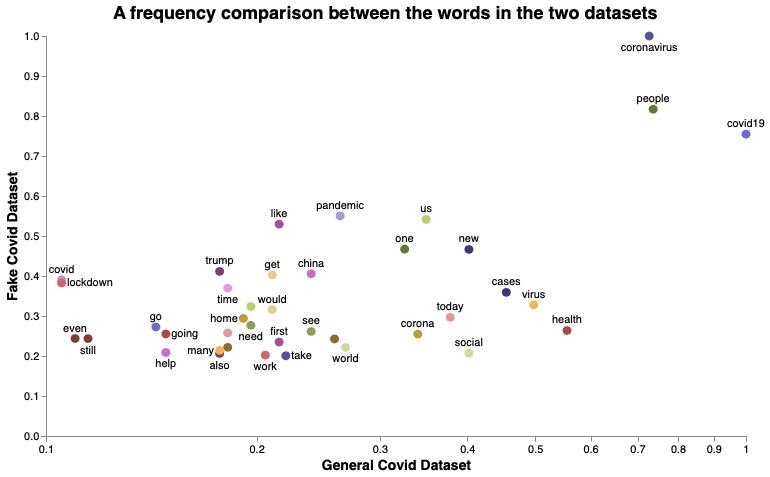

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042t20VZCG0aJx9vf21ZJEwkCFcIaRA7WVlQsjQBGTcaWXo0AHYABiKZeBoyLDQAFhKZJAZMNggaAC84NGSkWSTo2LQAbVBxJAQO9DYGRQB9PpQZYiQAGxNE1CGQAHUAoM6KRTIl9KSAcVM4RWXtAGE2Yly0IsoigEZqgGYBWoA2b4BOAAcAm+1QEf3e7xkADEkABrXy3e49VBPEqvd7-AHfd7ozHYgC+UlA20CaxACEm9DccRgp3OlyWNzuDxRzxefxe7wBBQEYIBRSxLwATB9oXCEczkaiSpy8TjZYCCUStjsyThFGxMHAoJg6eILldESynuzvi8CkKRQD+VyhQUeWL4UykY9nt8vgU-qChUUPV6BELCcTVZ1QrptWoJHqDYyjVLKJzubzAQKzSLakLHRKXazfS8in8BAC-kVqvnC8XS0GVaTOnAkaYoB0ZGd9QzncaExC-gVhRysd8ikLuVmO-Giji7e8e0LB1OZ99qyTdugGC1xBkW-TDZLXUUCu7eUPp0L3tVzz3R3G92n3sOD73T-eQUuQ+h9W5o+3r6zauzEzyfKpi8V67r+vwfACnxmiCXLQa+tboNYGojPcihrl+O45k8Fq4Xa+F4QUkIgDCTo-i8CErnISA0Es5iYbGYGooK6avByXI8t8oHYW6AhniK7o8vx1S-JRZJjGk8wgK2MZjq6Qr9r8Q7cgKnLVNxnYFuCLwCEU3wAtU2m6fpYmdEwyhwLoxxbm2WGaQIBRlt8s6etUQpFu8REaeOLz6YZ7w6XpBlGYGyrLmS5lwHC1nSdujE8ROZ5-MOlp-L8um9gC3l7lij53ty3x5QppnvqMzaxbZ8Wab8gLAqC4Lyh8XEkeKcm5iJwUBcZnU6SVcg0PEcTlTJ35MQmbxQe5nzWgIvmOQU2W5ryQluSJDl8atAh9dYSLsgxbUgS1ZFjTya0rQJ63vH1tFLPtP6oqeyVnheB77oeWRHdmmnTua-IAkK-4FH9oXBohIAQDgcBLLdNmyfdzylkDHXFoWAN8S8h2kV945Dr61SuQGeME9tu6w6NPH5gG2I6UDXpEX5i1PNORP+j6fpbWFb4YOYODwJIZN2Tj+MGfpKMBjpAWY618NogqWLyhiipXZzYMSMNcVtUzU1FkCc0iWWUvHTxIkWnORELkOBR9eIoTq5VmsI4W-yeZ6JYfHplqMwjq2CRtF1CRzoNUfWFzmGrd1jfmiMi9afyoxLXs6d6LPJ18ALbUsUX8xVcNjSUTvgvaceljizmZp9DtDn1MBIOIuwC1V44HryumPae56GQtFcyxaKeE361R9foRgmOImB0RHCUFsCheuyXHvl1jle+jBkHQb5a99dSgST5p0-O0Xbul573d54jrN9z6i4q1RYYRuoiQN5Xtr2rNprmpahlexO-t+2dfF9UON0XeOMC4u2Lu7Mu38fTzlNpbacuE+rxDtrnHibdnqd0HM3XkXtZxy2xLiJW1da49CfjLByTkXJenclBLyp8ErYh9pdJhVsb5kggLXOgbQLiPxzuTPewtkZx3FujQ22M9x6WYb-figcaxUXoBqBglRKQgL3BCQyKUFLpX3C8LK9DNIY26v5QKflwR9XhHAHAqjWQYzSh-K0Np-r2kTiKfu+ML5pz6hhMhY0kqaLSu6HRzj9Hxi+PghWeIkFIHDNY5iaZzxsQAsCb+KZ-qA2BuyEGciyS6BWLE54AJOQIL7LopSw5v5giLG7csVTSwUTYZ0awCAKTZxGoLPc6CO49iwe9aBRijJBX8iTJYpC+HtNzPvWeEDj6L2lnnc0Hj3Gp2VkHMkcAAAeowcCZ3yYlDR-0tGBMyt-c0wp8oPjOc+Pq6pLH2DgLIfUEBeFtMbnuN4nwfiYjqmCCE389IRKVoQv4SDkDQ12VTLqtN8YYgMrMo2ml8Z-19sJa+qzOjQGWCg-hPl2JJiAixUUIS3mEPliSl8DT0AcPMjQXZ0chHx1EX8slAL5Z9SYJMWE3RJgIFpYI0Wwi0aS0ZkPAIcAKitI1uQ2ckLizQr8nC8RuZdEAw5EDAUKrfp9QQKEAaWpFD5N0YawpxqjXKoqWk1VGTLV9TSNANc8RRkvMrp0l6PSW5-KRVIta6cKUgGicoKAtddmQMtPnGenk9FLxlhjJ8BUioFVRdkzo9Ba7wkdZKs+fLY4MqFUSiZNTKxlmnoWkmzS6BjDHrs-8HFkx-XicRKNmaBmmK6kFauUUlj0BoBcKtHwvh6S+SCH5Da5lT2fPGi57conhn1T4qeYDD7zygXm6URaKzVOLcC31-hFAjPyVQtyHkiJs0crggGsbJ3nNYWi9ABgmyVrnd9JxPJbFmgtCKP4Jyer9NbdepN6A7CQ1nWM15uZ1HJQOQEjKui+lsyWW4z0ibwqNKWDRBAzyM0JWwa3E8GDLwrueFk5DlLtl0FpQuueIaFXL3XrBKCwIN5cj6jDEDz9n1vzse+r+BHXg-pMZ1IjXMICYEuKEDD9sZZ0v5TmjGfz+PGJ-YJsGmdugxSdTLe8qluyPkUl3RtCV2Stpbfx2RxHwYhwMLszThTtMlNyicgh4T0R-rM0ceEE9H3jms0UnsdnCrfzcucwqly41INiGoYTNBA0sfU2fCj0yF5MvXXUzddT6k3r9YoNQugkA6l5UjaTIjc36b3sy5lNqTDgulTTWV9NYWJxEoCpz6X-0gFCFqcQ8RyPhsXVRv5Rnv2DMLH1KKu76Keb3FRsNB9I2joRaS5rnkom2COBuXtHyB21SHQ1Jli25SAMUVYibuZez2j2RB1KvwAsoq9YJJDXM3AMBrhKiTkca34viRmb+QMNVqotZq31BgIAME7WpzDe94tH0Szxic8nm3BVM1zGAFR4DAdiwZ3FgFUn1ugXBBjdHaOD19UgHAdgDAPtY5JrNYtBWyZhwNhTQ3EdgygPofLMcacSzpyVnGQ2GdGRa2ZzkwaZnTcLrN+FXn4eM-0i5rmcR4hPLB69qe1OBVc7EcvPbTW+qUkinCXZZcxfgLdonHE-2-u-b6vYSYdddklgdwWJ3juOSJzK+EjObAoCwnZ-Sor3O5tC2RSwv2NrPDbPG5TzNBXs3+815J82cDYGziHMzqi1gzAXH1OmlXBjMe1uAiKEdku3m3a9T6jLyx7DarW8d1E7z+01SBNt359P8dr3b0x31mdSBLHE6gvPSSPvCkJTzt5-OBtp-YTc4BdfKDaxmnrEEhizeDeM1P9FFm6CR-RwImPnPGUw89edb110Rg6nUN1g+lGZlycteq9J6qlPB02SthQvvCu0-j2fcdIXL1E4yzIAMBiHtx6xv2hzHxsQUgW0VhgKiSgGUCsibH72xQkTVxk2-ynm1wWz6hEyijUFryjwSnA38W0WOR4z-2CwvWCyiXuEIN3yFn33V0P0gPr0Y3o1Xjxzl2UxoFIBQPGVRCN0mRN1LDdxl0G24Kom2Sii6znxoU8jvF9Ecl8lnAl0VSeBFGTzNgQTtGY1cANV9GqwclqxhXUgI3NGD2kQ+GuXsF1Dn2UmKBs2KQUlKT00Dxykfwt35C3Qy2pAgFpHsJIMgzIJgx43dm1x8Nax2h7XsJdUwTendR43chP0sJEhJiURgH4NA2lEhyXRPlYIRk8N+2BmfzJDiDTWDSYIwIqXEMZ0kJyU8Bi3By81wy6Vemw2+ya1gMcwANaw8DBTnxHz-Hz3xUTn+F+gf3v3+i3lG0N0HXqghFeCahSUtyKPZC1XKINQmjvD4h1lmkKnxkTk9AmK8IFBWVa3gGWHoB32aLUXY1fXsW4wKKHGSzXVqTLGrkyI-1jy-3607w4PYN110CQJoGWHyUlhKHQIDGL3UOeFqFeILTdl6LMy1GhiyOdVaNdQSJwSSMRJS2Sw33QF8kHCKG+IP2K3cJRD6lIDHlohiACHRI00xPiI6KSNSzeJLV9WE0uC1FoCgDJOYIpJLwmTx04IBNgmthiHUDBMGLOyCMu3dGoxlmxAti0InDCy91hBwFoixQEMdjAIS2XWeIcKoKCzymRK5hHhUArTsKIO+j8WCKOVCOeJH1SODz6jvVMHHhuNz3HBfhfXfi40-TZI5I3ULEiLM38JUEhhzwH0YI50FID2FPrzlHdwtLBmExiHf0GMMOpmMLplMJSW0NVMT2tgYAQBcDR1uJsXzLlVhUpncjd3xPeJqQjK5kzieRFwXmNyBgqXd26JFUUDGCrN9LeRGOxxHxhIxPFI71XiiXMEZMjmqEml2MXwOJBCOP7MiV9XkBaDIGzyvymShyNMpOlFWKmJVVKM6CshGCaNHKVT7U+S2wWKnOjST0TxTztHTKohywGLtL9IdIVOgzUIxJLJ0LnHuzBiYFyx93sKb2+QaiWIxFwV0UmJOMvOuWUGQEUB9LjIkVyL6woNFPYMJyQUmEUCbDmOfOHSQuamePcj5zh3OMjPC11OyPnx9GEN6zvAa3fPAstkJJACWC92WEXPnQNOPPyNPIRkJ2Irow9IUFyC9NBLvLwomQItvxh3QrWLbKgoYFojSA3DEs0jiO6WxI+mNN-2oPNLZShjuHuQFOqLbzFNkoryiJJzoBlP-I6WZLMtZJdKYqYutyYAYEPJEMIuNLQvPN+kFy5lkBriYBpXsK4vAJPOTIRngTAoXAUpwACEwGMvHAJWGKSToukt9CiqtV0WtzHm4HW0b3mOHTkz40UxsKeSQDIDYuXihN+K0vZLxO-PYT1VojaClKjGSo0ogLKpKAHgQ1ZmuTYCOEotlOKHlMOQDBSQqqiu2nsAKvwokryKVPmRsKyyixUClPoOrPr0fM22bxfL+WssoN7EwrYCANGCs18vaN6QoMLX6vLEgvkWe1gu8psSjm6t8kTh0hcv+JG2BLyt2tzHgpb0amQqSNOK8KvPQCskqFtIYNdBqwLPlQbIsrKuSmLPfIGsaQCAkCklxtZFsxcIHAcMwM7Hcn-huyEmYq5jQm8WBqeBZPemPCelfN8TtEWQJjZjDyDViJUicN8wZv8xh2KM2rcrMwYCQE6plimy4pAqp1+s3SQTsFCF2SKsSRrVKvSteD4pLIpvQFkC9yaBHLUsEIasQveXNthNLGbJ+unl0qonMkmGxqsxlp8x01cOgUvj7kAX0tiEdtQImTBpYKmsCpat9RgGaG1NiFUrjo0LzKhTqzcmZvHDjhgNTLeFwOR3EFhGVydrZHHLrUnO-h+misty3kmD3TkIbNzpMIVoKICjJs-PNn+vYWruzrZGusRruqPyhpco9JolkN5trqHwnKLxOXgzg3Ft9ANpoGUHyscrj3urjUerORtvBhsFcArs3AXonHuMDM-mDIKJjQ-P7qHs6AYH1HWUhh1AcuSoTqFI9pLhnLkuIVJ3OFjNHsFvbixP8ukuHFcsJxPszKy2-qvq1oXR1rzmfsyqIiQXSBHr1NNrxWXtHymrXwkO2mRzRL3p6uNJIv+Ogk5rBjvgv0mHhtRH9I4zfTvr+Syr4pGw-ouBxsurHo2wnsaooOar5wxrkFjr1JPUoUKmoQ8ndsriBjgfx0EoMBcCgEDSoY1yZXX0Ytmnmv6KzvwZSsNKkotpKDRuKNirBh3SrouvvJNFzJlQJoMhSTktnPNDCwYFkFwvAYmrSo9tMOlyMgUsGgoovt0cTqsb1teOqrUHZTSGzKvurUIfrpXph1Lu6MahFTfrAb1NBqqKKwqQnxM2rnLKlqvtOxWsAsOQqVmtTncS1VoiBtpqupEZdtb2NJmvXtZjsZf1GB1ScZrshJKeoaTr6vZK3ngB8BkfYuvrtADM4y4aSJSNuxfvQFWw6uUFGfAakx+L0Zhy9rDNqXqLMiQEStSY6e9gmeOeNInVNKuV9SAxrjwDCu4smots5C3MBAufQBDhexroxnGYTPjmUfhiLxyf22J1kBB13p-vudif-oMfX2IVB32bMd-qTP-uVtsaHgKbwcWe83pt02gUwdgQYaokuM7QCIXpbggbwwPELvkmxEAY4KkYQIGgGgNXeyIa+3MILHKeMl9rJGiA3AuBYaotupordugTFo8UErEAKdYcXv5cyeIZ+bXojsEocf3SUPkdcnkMhbGhgR0oBwywgGEpyCxcWcOfJNxZox4YHo1JAcKftaCcsdhOFBytQyWqvodcTNZfjo3r6b0mtk8HrhQeRb-pUY2ZPwBZAAs0qPBf3qFYHv4q-MAVy2R3ZTcCODqqfNlZ2xOewKVCtdyqyzVaZbaLdRxJdIeoetwLYA8AWeXi9cOqnjUbFNwKmE612XYYeKDJOX6eadci2ZADeGEwCHMGQdubBb90meTLC1U3LKrTrsLy1f-qad3b0N0EEeccI2DrJbDp40ci8eIq8XEDXHnaEcXc-weamsMcMcGfFe1G6A1ujzTeXdRaefjRVq5gz25IYC-o9a6tjadckxffXzfc6E4oKBibjck2TskdaaOBjoCfwZxZDYeibbNJzbGBraDacvoumYSd9W1VMftZw7+OnsBMo5oFnCQ6g6YijtCEeWI9o5ObVK0IUuQnA81tF21oC146fpPvgEWrYFUBiMDc7bkwJzoeBGpfFY1FJ2JYg5-afascc1yaBT6ktG+BY9w4ytDNOf3GOpiA1Gk54WM+FV9UCSKB5SRa05Rc1nSPbqvpd2dx89d3MOSgtZ+zZTYH8cN1DXMdNzCPxf-EA6guAPafvfSax01eFoSisrNLORU86H1HsA3aXpS9xyU84KTd0EaCmC-bS4+vreJotsC3S-HWeq1GE1s-Gv2oirKp9BsfSW2ozoWs+dSu9eXnw9-3IdrgIMvoXZI-TZob0+ayHlQwm-vYhXxrrLcm4fM7XUndyvaw06p0g5M5KHq8PqnS5KQHMF27zlqfO1INNaw29oRLg9toGleoDcm+4+NMvcAet2HKi2qYXaHdvo-W-kHDRYE3m+7S4-27v20ovKkZaHkCLZuoQp6bKoCgvM8JPpCoMou4x3y63dS4MUU+ntnuhnO7tc06Xe07xa68tUe5AFyTJ8W6PZ7IG67b3kvXq7FeTRC7O-BK+aEMLDMIKK0X-cy5GziEPbGYb2LeR4J58lqObS5-QByGgAkHXDs6PzHb3d9XEDyvpYXdMs+sSLI7M7eKV+SFbe1Rpvvam9-fc65MpH1-vdQZ63QYSlmnR6mPm9beBYOfk60okZbTh9MCzMR9EdLfooy4eoQYUBaDGrk7a80pdJg56knY8GE364sbZ68yO8nWtyeUQCYA8zSfHu6bl4kRZV07xBPoZGL4N5PecPJaSK6JyaTdy0jF9-wYoRUIUcPVoXL-akC7+mtk1BoF0Cw89cT++bxdB4Uzp8sSUu1X5MGOKa09u4RTDZ1cEuHjMCd+Z9Wqgx0Td4MT+axBPpJwj3eqejrfMpOSj6j+pO3q8oXau4P6uwoKr66KTdgBok75Jaq9v4w4zm93SdgYG2S5Y72zPCLgdXur38RuDvI4NEB3oT9K4LvGbH8hp6WtWsyAFAfDA1wPtY8icbwi2Rma+oMY4KZQs5F77yE6E9Fcdosli5URgc2jWPlf0gb81jeZVCWCHnZoRNJe4DNAeLkbr3cSB5vBoPQACDb42BzLarn8lF7UFtovBYapgFwHftKebnaDmJ3AqAJ7KigcQDaXBLI16qz5dfvGFKRYNM2gIM-LoACDIAO++SUvtRQj5lVdI5ba5MwEWoGoqBxrI9IoWSTmFvGRPXyNSXsDsAea9fRwiHT8xuEfm8TWpIJQGjA4bmiXRwSWxR4W07wT9CwaAKhjnUmeYzaAe1ysZK00aW8MbpALGaCCI0jdIIUT2typAgcNbQ3rIKSJWFpEWXdADAB5iah4ALQGttLyR5I19GpDOfu4P4H4Nw+ixeVjxjShl4VoHQ+ngEG3iCc84APVZkD2b4bc-q5iAIJWQ16sERs4wxZgMMmED8ciMPdCgsOf429-eyfTAUDC1SNBRqf-DtlP2CbLxdWa9LevCH2FcCeBPAxrmKheGSZbhU1EoSUJtRmhqg+Qg5u91PLbVb2-QzdgSjOFshPh4tM-AgRkIVcn0yzDho8Xvqo85hfsQSiJlrgQBtUSuRKhh1UGq4oeJzU3niSTYcJFAqvYgEKDy4at8eGA6Lv2CHihAVhDCcLgRW-jFgraSeRgWqFQxrgaARfHEfGXUHIcz4Ww1LCV1y5wUy+tFYHiMPCavMNQNJMPmXwwHgjuuZA3yL8LiaB8wevqQNAYFK7UdQK7Avyl9QCrkd4h-HMVKQGNqfYCGnEO-i6znCSjOgbgGuPlQv4GpGapLYpKiJKBukpECQzOrSM0igjaulLRPCfVtTREDAgogxKkNl7cMS6X-baOVy7IC9XeuOXPsFhPqBpb2FAo1oo374BZ7hQY9ANBS-rKB12LnRUax2wjW4+8bAA1HKXqZQZs+8kPSLQzFKCV1QbAPNnQAqHgMoxctJvpZTZr-DrcjQaTi0GSHM8ThRostrN1yZn47aAQC0f-QPE5MSY4gUgEgxzGgI3hg3STFoItgLD7RdEK0u61PH29fCUMJYJx0-HQcESfVOnvej1RVYu67jNbkkVn66iMseBEAvYSqG9kQycQ83nYDUBek1WwoxPqOJsQTgYWRCG0XcloDXjiOKY-+kPyfxRJ2smfSSjhPrwmj78SbbUhcEsytdr8WfJlM2Lp6YB+2hopwekJCYTjaGCDaTsjnlFvI8xQwrSp73QpSMcgSwdDP+LY6+oXASwWgH9xSFdN+JMYsNCIJ+p091QNAMYIOxvrrCniHXdmsfknZv02AwJU6tcKgFwi4mw3ULL6nuAtAjhKjc0HU32QKlG6PbDeCfRgSkk5CLPQ0hDUZH61KOwgZgGwBeAIAyATAP4EpN7Gp17kHVFKXvDaGrjq4EgE8bEQAHQMfmvIrAWZnklEdMpvOctgsJeAZ9AipkzhhsOeJ3gh+dPOqWk2RE45xGlk3gZR08CeShO3ZETjxhakySgYdPUEsCLiz3i6JCMbKe6VTpnc7aU08SuxNon2cMsxABam-S1CycF2SXAvCiLkGWDyaWqELlnjiCVSJEKo5LEm0WDaNbYg4nyRdjWqzT9wDEmKrgWUAOSxm3fbwQ2IUJfpgBYZSdsggkhXT46YTAbMxhoA-CO6oiAgYSPSoBgAx6pX1GwCYD3BpWXYx9hoLizijM2ZQpMUXRmlHFIp66dtEsCOwL1tiC+XWOuSF4wMBQHPY7lIzUDGTBiJqLmaan+hexFYBMwcAsJ4n6gaJMAoikV0Yzm8mgNsQOghPpHPFzwcQ4sNcmc40zV+lPUwTeCfGmwDa2oFSoO2HEhFj+fpMacDByp5UDCtvBODxjBD0DU4glbCvCERYl8tJaQmMTpD0nVJuJUwCkLRAhnSg3R+kvqCWDRCiyihZ4ysY+EEoZ4rIQ5ecUUyHG+TXp32QId422qK4HBXwLOaCBznZy+IfMsEBcL+yXiCCXpPiW7OGEK8uodPT4KHJxlHM8ZWBK0f5CkZ3pdBEPcufmOybyD8oLYkAMOCBD+zJa9ANVsO0-jWglmwSB+s5CyHJ5BK9wOAJ+HsIHTh8WTF0nGPOjRzbcImYma6GE6Q4jiH0h4b6ixrlcmhDfJcWe0barirCClWgPH3+6GynSxs4lNBL7o2oaQ7KdUQnzWlizIq2s2cHwygArAWgXogqdfygYuiuB6Iuar6nawXAF5S8q+msManmSLaPoctq3MsRhyk+JDAKSCHP6ZxNkdcb6Tgun4fDqpuuQNHH2QhahWgZC94fdFwLih90nFDSrNM4rhsB4J9OwHXEQBRZz5kQ09vZgoIALJ2RkuwHljlmuclRCUP8OeMVCTt-Uv3EYD90DQrS98MinsXvGqmvBmM51AcfXMdYHdXgtQ2cgsKaQIA36XCbcWMzf7PzoELMlmWHmgpahO5Uk5Pm-OCGLTWg9gW8WgXllgiYFoIGwrvKWhGE86phN6elATYbQrhaiy6WxKPJ-ypq5MqpNSRBy2Q5RQdIRY3yvkdd6OinEbAX1pI-TAmpMkaVDP4yt1FA8IVkQalYgrzUkbuU2eqhGy68MiJkvEWPKallUiI-wi6H3OWniSEaWE3+YzItqCgzFXIGvopXkBjwmhhUqBegpvk3zrY5gZfjGy0UHcPZwMtLMF0USVBIe2yplGksrBJtLi9wOvjbycn-0zl5vCRe33jk0dAlVjRVs0z7keS7abgDRQqNxmyLjQLbdIFUCMXBsNprWI4NjWOXdiTFzc8EHDy9zdoVBOSrTHkpEX0Uj61lauLqkkHRZrljk15Xi0AkPdr28gRQIbX8XqUKlkVLhV8N9QFMWJ2oF6jbHaCUqci1K+EfSr4WKBFgKwZ5a8PGW4KrG2Q7ISNgzw2AwlztbSVqJ4zPNjuvc4Kpsre6EqaMHLWSpGzcBqtwq+8r4GMROkD0T69wa3kex6XLlHEyzPVfKt-wLDt6EgSVXcxOX05T+5KWCTzF+6k8GFD4s+EXKtSkqeETQELp6remlgql3UA7EgHuDIqkl2q8hSh2bq+rGOmZOGYG1uWVx8wXirbs0HG6ciMm3ImHLEpRSTs2xsIPoPyr26OqDhbkpSoYoXp+DKBB6GhBMp9Y-wrVcaLljYAMGgrSOXA4kcJD7m5UPJvBEZRoQcSTyVmzkM3Gcr7khiLgMhf2YUVaUHJI214rYgQM5yaybEPIT2XUjZkKAtQbK8aGZInn+k3ckc31tunsAHlwFToo3g2y4GFK14SbeQCBPxUFDU10HShTaO3pQAQcofQIk-OApMpaVGIrldeLH7doD1YU9aTx1nlP0S5Zc69TIMAHryhJBOZkViNMD+FNQQauTPGsmLW5sAubMtXnGaHIapqn3dVXCzSD2Dl5nUhuvmv1VmwJONgdqsOvVa5qjpJzYDbAtgmTBYA7iyei6QFmWwEGOpTPAbKTmH9yCjzRjSJrZRTB9Z0a-nl6rHSrKFpGWRABcA6pmB7VGMZcjsWmj0z5oAWUQS2WAl3IDUkkwTdJV6g2iJABBEwJBt3HaSTkmKoLKDIWopN220aOjWvPI2odTEDs0II0DY0OFUVl89FVwJ9X4auS29UwDmuS55r-5sG7QVyQKa89aNePTjfRR1FGZrcB7LPGwAfn3tFxodSLcVOJUtkDO1QMCW41W5vSKN7eSdrZKQItcf5yS8OWmrU3MIFhFKrpa-FNVIyQmLkh8MxlA6JL2tMaxhd6oUU4FicRCkhKxJTUqqmF3eMVG4qU2s9wVZmFJpBpNoHSN1qIVGDAqQQIKosoW2WmVrKQvywMG8v2JOxlkgqr6y3WsvnWiUpaFw3Ey4HZKVU3COVVjYTdm2JwPT5lA06aYKtjVnxP+hY83jYOhitsGA1MybmRK1yBy3YQ8RoqRP+0e1fIqGx9S20zqvqFxF8q7TEI9oAw0dm9HXrYLKX4MUFBImoS3yawn1YgjjGEfg2wy1sXowPSrT9RtTNBbF4DZzRXK0p4aLUZ+LhLTuOG+bt2y8O7TIhhrhgdQWOiHdNoMzzTmE2KyoHuok0vSpNzpDrq2svQLC7a89ZHdjq1wjbComIlYPIEg2FChVqLPHXjhPrhgV19U7pYDzQU46q5Jic3iMFvbGq31K271VbqTZzsIAHgGuN7iHnE4gCngaFf8u0U4xGtnBTCvwvLKJ6G5AK3nPcos47kBoWY+1dd0dKAbpJ0WpdW5MyUGhqRUgzbRxK0ph7vu28hLYdK6lCbj8nqD0gNFC1NKCuUE1OaKSkacUQpLs4wSLoCpi6VUI2KYM0Bw1aVplHBCxTvXdXSCb+RU8nfgo+AldUMmq+dTKEp0n0lEJCIPULpl06Sw9wE+zcoBCr7qBNYjD7qjN0JkCBADShJH3oFDXY-m5vKjkcGK0mrGlyIlJL2sPReIyA6yWPRlmBD37nBVjTvTdj7nUi-9vynyhAo4F3r0Faq9vLMohhq9F5oWq2Y3MBW+omgHVeZg0sUiBihFTayuPhIWwn0iOHCDKZzOu25LfMMYjEJXwBTRya4BwffTKFm0VtWs0QYEjRCByQGoiMABwDAYEnLxAdjkcxN9oPYSHIyiOqtmDophciTas04+hrqTYGAeJeg4jatI62O6O2hYmAhcvTqeUjgvimjctorVgi0xOha3IoGUCkBIN9isvcn3uV9RzQe-YPY4ZXY7lbkWWEsfXug2RVedXs-jjsGMP2QIl3derBQW63zDWq8QSVt5vmRWaH9qSpWbDshVPb-uDUhnRQWiN1IbU7hvaTcpD3iVt1BsZhUOVyz8Gbp5za3NvXUMorLt0Q0dqkY2g6DLNrsrucL3kMs7LgveVNjCsaY9SmEk7QNLYBoj7lJjSeg7mWCn3trOsSlHkpfi7XTcnDIq5PH1GEAk5a4CgULaVp6NACLDunZkezN-UbaHDUxrjVvzpUZY7aRHNQL9qgEo7o0zu+jE+sQAkJddN3bwwUoOOJ4FhOQLtCgaWj1rqBvg6BL4d9THHeFpYsZUIKgl-HPgNhPhUv33TgT6tJnI8BEXmonV-9gRp45ZQ+1wIFhGySGJ1kF1mMfjP+YJXqxiD8b7CnOw3ikj6NngbC6EinC-28kl6-JI064wrBK60RFJuxu3o+LgGH1cpbh-KY8ZWP9YsDaeyjkgF4M0gyRMhnSUbueaS1PDJRkdmEQLU+xguKTRZWgedGcCrG6pwKVvDoBp1GgXghtb4LZiHbD1pmvndukuAfiIjKSn5k4tNILC6IOPe0pJqNknJ3lbiUAUVulNj6ZeHi8jQMv-jW5tGHannnfplNU8vxwh1wDRD7zAnS9R-Clrlts2wSjJjJxZmWPGUbVyjJ9XXnvtzNEGqpghq4ehH1BQwVDXMYtUAVtz27mTU8HuS8ytZp0flJZoCmWYoKfqMslwBAJymiCqzlVQR9QjlSBxekpSfBPU-dVZP58EuzPLkx9TKbf76hNeXVNsfJPgMXtkS+VAFnBM6Fz+2jW9k5pyOwGcd1yOANJx2Rz43tndSFENodiFI6DQhyMoGmwCzqhzFu6Dtxu9DN7yePcAWtyZGlpnfYZ0hkLuanpYmws5OMgPkEy1aH29JDI+X3JvasiazqAnVegJGkzH-YJ9RANsjYBztKLg0usxifooPq8cq7YErslf5PzvsIrIKHqyiiHmpe752Q9GmdVH7uVmZO3B7oG1e6gL5Cak4AtTqeaIzd41XSpsJ6jnuQhLSqFheNK+6w1eor3LHwfi9mwYYwCkDhSMtTUuL9GE+sJXamPyozDi2VXbLcR9y70sIDshAD-Gtmc910uCwGEjbxGzBR681a-FwQHgKz1Y+AN7iz3GK5Bbmsc61ktAQgWjYi73soEkgDsgrye66Tld9SuC7QVlqiBTsKQBgKrZIN+oxeEpzt7d76qHVwf06anILWRgzBJZjGzRD9jwjkzTPlpUGtMNBvAYVEqqW42Zdl+wn9PdONibZFegGOIv3Kio0TbC8sURTPW7q-yC7U4TKueLNidBxAefQrNIt09dyY3XloVZMWOWPkGZjQwkYJNvaAsS1qRrCGbMGoorY6mrrCTvAdn0jXRqIfLTJ3OovFglChnFNqt7Aithwc4yTsuPXz5dMfLEd6VOv7GAFZ+TMtDE0t7VtLwa-I1WGJyk5FqzwtfZArtM7tzTIoJNhSGpGhbbzSRyCcaXqPbDXmadR5PZasZb6u8leEhWwAeDLyernE867riAx5D0bcBrXlryQQLktQK5+9uxfCrA9N+G9cReIBsFDlcbVK-G3Jg7N6L6V8QepYRY43EWrGLxtWyTFAK62oJTOhbFI3WRfGKTqpldIAk8CS3yJU+9YvSvJvoHfrDsdNY+asEqSKgyx7PUVdzBpQKzglIzjmUZsQTgezqj+f4EDVC2hjKZ4VXnqTayjLgyOBW98ZgvKiSrbxjuYhvX3LKcdoVqRkBjrE98fBC1hWT6ZiMO8oAimhesVSIsmcfQqlpRRfjAUqnw7Oyu2z0SAU-jGwxewg8FYmStHzlLbWyxqCQV7XNR0whWc4Z7An0YpIshS+OtKPNTJrlVQSn8AIsD2UrzlP4+nvh4EGWrU8GeyWAuVStWL2R9O9Zp+bbQoYcAcyM8JV2mHIdY6eUxclym1jOTyFk80KzlUc9zeXpD+y4BaNznWs4YB46ucpOcqMs-tboNQsetaWf7auvePAaYR9zMAxACAJcDSBz6br22oTDHWzXS02DpOiliAZFDBy3qad8fcMYxuqW3b2AbWw9ARsg2IaTe7vNhrjuJGE7PGLEAw4I0dZ7DtzUFlbK9NDhQL8oLlsAWodJnBhL9nHViYciXjSucfGEw9CWWU2uqqe7xb4TG4RieZlj3mQRktBLW+oxgKLH5eL2kaN9zqYu61n8IWbBiwtm2fvcmJSN2U2AGwPwepsiRJ2q2ULfTtNPNS9lm3ex6sGkdLc4T9dwGWETQvrRrBEYCK3jX+l98FCnp4HrLdsBNBEzMj9WY+3ke9gAbcC2wHlXMeDFADWWnnU3YqMqSddCE6ixxZs2fBpbeMPuWQFWDf2ptOlv0ruzHZ9QI9-Wne9E76Uhm8oQsqQ1FD23A3KDykfyYo6JsZZhQWxfTXTP2LGawiehgBK8w8EDR4AkG-ayvai3VOrW5ZbCs494fLjyN0lr6eSMpF6PvRQxX0f4Poqi24FZgB0dGh8eRUuJRT1QCxs+Nc3-6pFgUBffMDFOIXUWD2x8MbMYx8+8L8F3YKRcdOhpaDY6WmJ4Wsapza1Gcy6XFPOZS0NyPmKAqvu1G94QlwLb4ytPEv9dN2s8rGbZgJC64Sg+FqJShdpqSpx8kuz9oRZA3hFPdCyRLNgjf8JA8LKRSfbBUMaCX1uRYHSWyWcnhT9i162jpLnt8+LIDm06Dc1qvPW7iF8Hdg5Gfj4pXHwc3mALyrZOQauz1ckZsOI2zwbWqQvtUYLs23fnwShBkog6rCYhnym4NU-uwbE4IAGLkp1KTxVk8ldOZhV92uCOwTLgnWbVJg4knP3cjcTRdZaDDy95pOvt20xgZx2smpG3QajdKUBckbHn+Sn5m1blhMSBbCyot7ev9saZ9zO5GIKfqKbDWwtNmMa3nD5DQ6R7NT1QNlZ7tsp4u3y-Rw6uQfc2w3X0kHBPeHMmU0rrkzaf0OBcFKGHDBgykTuxZ0v2zijkfog+d5Hu3kfji1FIz3VGSsyTm8-X8kH3ikHratD1bNeScAzaBfSg03lHsfJXFXNDAR74RUTkOA+KfFudtBX2xvkXcps9QZeXNbn33ibvYzm7eth49UNeR+3SLXMfCs78T+wFdZthmucP876Fz3bRmoOhokGxCWy+eClxo7iu++P3b2vonlbZRme0PDG4S9sXKH2U2fCOvE5xAHSswNw7ncu3emoTpNmSM6wzopn+ImZzpy0c18vHfHvMyCKWsWKbA0hM9964tdvTlrz7z4KSP7Y24CmLRquxsQgCwhR5a6wUonF3fWThP2oWPvYBXeF2p4YzyOgXrkumv2dizfi+5YaxGfgQUjCgBzKvouOK7lcIsCO4lPW5cqwlWgK0DE92ek3RKlpw0dTrmBZAGodZBspgDCUNQDjre89s-d5Pv3PzSz3ZoBd+NsPmisjx8PBt09Fgrlmo7h91o6vNTwgSQVGrUenCTkXngePNSkdt2Ih4Wuh7iUp1cv43sHs+KraVbodkDW7rNx+efj63nLmpB1+yp9fQLBPGWNOhF5kcy7B3aCcEKjIWE9emAgiib4jdR5ImMs+oCgGoF7wT3r7Oi4D61miTxvtvzwOa-CYbv3fU91dxodbf0+N0FvycOYxIBnSNgGbIj+rbjgC1AgP5NsHs4Gc61U4jn2Jk+SxPKHQ30AFAalOj7U9tnrpoLlSTEAiyolUMBProL+rm8338PvqFLxuAkBJVSfU9ooPoqmA9vJ+u34oZ24yyoYKyLR5r9YNsHyfBtHqC2wM2LFuGENV9fbfnnkfThMvbUugGrUScmrt3FtXSJgL7mt2+vMjtL6U3PZ3WNVFIpABAbA-Jas2cGkgydZxdK2kJzUjb1O9EvButtVxuLxS+7xZk2vzPS58sTdcheXV2Az9k9JFPJzzCtoIfjMTgAlqzuAH9L01+jt08CgOAfO87cHt0dz7Jz7UsWdt9BLQrODdZF2mix0+JIoJB2in9Q94s4HZmK5r+bVlOvDN+z1143botrRz+BwSrBj7MOSZd3bfb9bK64RqxmrF7qksTg6OoZSvSDiT0nX1sGTZROWHULAG1Cwgu0YgOnzgCmBJCWjqL+fh-Tn9k2WHyZjR8vCrt090Itlmtsr5Kpqmeb1yat7j07t+a4mXt83pDVDR0-xBadZQHaAvfBvTt8AxM-CxlUMWvWN92vRr1W0MsQyUWBdPMZii8jHDTGHt4vHchsBTqFvwX9c-V2zS0gMdyVpcOvZUWZ8MsIBwXov8RGTdx0-Lj2TVbmcVyoMDuDED+NnLJAEXtneTp2qERpDZzLouVYDjUAeJDvil0KeRf25sXnQHFb1V5WXU1p0PWLRWx3PAXxx1F9eCFeZUMRnn5cZYHECnUoPRx30Ji-YoQo8FhXXk+N4fZ6yiVV6SH37gyKMYHDgNRaVSud0qKOAN9FBCinuNfvVxhW4XrE5nF8anIl2d82PV3y4EbneBwCAOqSfxICb7dx0jJxUGIHCNOfCO2lBenGalwsJAQ4GL1hdNh3NshvZchtREhRFQD86feICWBdATQNWFCbBYUYNWNWz3jtVuVKyt0p3e1ChhgAyIyTov-HR23pSnErVrdytHHQbdYCJNgEB-PR0SQ1XHEEXkMhZbUBgBdeJL2cdDHEtzTVkfIZBCMRMaszHgRA8tVgDlRXwI00rxW1X0FFffaV19-6aO3z0NNUKnP91HbN3J1sfLTzfpW7V-1zFVvSS3mRsfFnXFAVvVhwzsQmeaipEcA+9m85AQgsFWMv-c-mBIIwM-wSDcOXAimCZgl6lLsoQvc1L9KfRQGgoHAbP1hEp-AOWq9YJWEJEoM6ZYAGgMQw90iDiDDLGQBxAXTUTk9ddKA4U3gPQ2rFUMIyVS9-vFJ0q8TgkyzODWsCgG0Y82VtkLYDA9c2y8IgrYKwJ+rE+Xb4N-GPUFCPhHENaxtkehQH9f7PeH28PHTwFncgkZ6Ru4Vbdd0QNz6fg0JtqxFhh-VFQxEPwDcQoHFCA+fUQLwDK1eAMtDQdcElxcJKBz199OQaT3GN37EULEC7lfIy48dQWdlbcWhY0jusvgf0OUEEQo4OeD3Ze3yzY+5cwEvVYHEINcxRsDUI-1stMqjWMr3PNxCNVAAIz94PPLKX-saCE+XuCO+VL0ntEguaTXsLQbvTYBjjKQKIYzhI8TXAd5ffVnB0A14Dh48CDcB8A0w44K6ocgnyxkI1eRsP70yXOZ2Ppp0VwGL1WQr9xjFagUK0Epn1JSmNNPdMyWUsSNWJzZtbnCGFMBoLJQK6pkbLlm7dsKHRhlC4AtUPktkFADVJdUed10IlYgbCkjCYAn0PzMzMCC1GBCPQNzp9GAYYKBdow+oOLC8g3z1C13vLzAolpidS0hh1rHsjo8CwMPzakitDUPAibwB03D8zMAw37YKw1dx8gzpOgn-Cn7L4Mv83yWMOfF09GsQ74WgoM1LcAFQSlp8aHW7z4dWhSdzMs5XHCMLCU9CQMAJdBXXi6sTKeYPbdVhbH2AZ6TIMLI10qHEAYcNGX-hCcyIpPGjloPIkPEixgzNCHCYQ6jwnd5ItSwyw1-DN0dcVydvz1gjXPOEMgbpSdjIAhHLzk4i8adoMEcNJPT2Gdg1PSwPAMWUoMYjujZiOalZfVOCjpCPMeCjZGfLKV5MWdCujEsBBLEPnwMQEAyFlxjdqj-06fSyNTsamTVwEsbHC8AZczpfUFnCEfbwMOttIucHg0WjCnwyxrAaGAjBPgi-2uC8PQmzb4lgakAXIZWWXgOsbNQ7g4c9ROeg8DKwkxTEVKPbkP0DKAgCy8CMQEyONgg7RBFeZbCOYMNdgwlwXV82pNQF2shGPTUMi9iYyNwQ+0Li0qNQgcKPwZMg74LTU7rbOw1sXqf02RwnbAsMPDYLHyLCt6VHAFLULHbmSejolLyzgw+5XLCbBM4K8w1CHdZUJxhDQ4hDrgdmMcKS0uBVULMwBRNWBaBrQnzSy0zbO5RMdJ2N4Fq1ho+8x4CGHJGM4oVI6LyH8LfbdFlEgo493QCokHiV31a4HaFyA9oC8OUk3jSxEaAHnWhzu84DG6IBgp3JABS8jgByOQCegiV2KFf3KcMmjd0UEk7VJtENzkFswzJEvE6CJsAPDwfTXiF9WsUIBikLIJEThj6NSymLCnqAgNIwPA-aJIjlREqI8c1De12NsOpNWI-9lA8aKokD1L3WPV2MROGLo3QhYV0gSgMoO7Z0I6wgL13JHY1FjvfXphZiM-OuV9iQApOlzcpGZ9VQxvokGIzC+YycJO55zBQFFcAgjaxot6KFyMN8hoKPy8MdDUsGRs+oHEFH1zdK6Pm8Co1PFXYeJGtlQilUWTXnAfLEhGCdLggbyAEGXAyAmc91C4GiBi9B-zNpzUUi35EltNyxpCPLX5zXs+5C4ER0E3IuLljIqHYNawbOKOMbi9xYyysCr4cunwIB418NtD-NOFQdkEWHFQMA3vLENO0eVc7RrZg-FGmakRI-3wADiA0UJ0Vl-VwJ-VUMVRxkdXtKJSJp+sbiNawXAbeF71H3RWkgiS5S4BmszQyyhrCsFCkF5V+DFuMMht+aIBZdozZuKWC+GXhWjZcA0+xoZxQlN3wIRYsp2+sT1SpXMjq4HLzy8CvIr0eklQnBylA+xG1lS89Y6qN+M7I8kPuRTqef0VtAgyjEG8IPeFT4EA0SeM3iMEsEX5j44+UP1FVwsO0ETipB71ESFAblhcBZYpyLkxPvMzH0Bu0OuEqirgtbx7h0nVyLs1mkaxQgsCDXCIkQa4j8jyD2qXXgdR+DI-3SJKgaOPhi01Hm3N5uWDOUoTLXEUl4CFhLDSyxArUBLBFAElSRUd8wvaIHCQRV6L6dcpCGBsNuESDRQCFgyTAli+RX1A2RRgOv3491dEKOuR9QcsnZ8YYjBg4SIEVzVzcxtEjwhwbIiZGH9KXDUEpEuoquOlBEYz2MrwlgYAlC4cySeyLIcLPqTSBDE70K3jk3VrAsxdNW2OitRozsFOR1jIeAshrwweJBM7w2rhyDEMcuhiBVY9-xkDLuYROMCizaBM8T5qI4H8IDQphK+8nkAoP4TmeOJKEjVcbH0EoqY1v1Wi1yA52eJ9IbcLp5YQUmGDjWg4VWiC4qEOGEos-DCTdispAJKtZPAOhNCTVhTsNlBfg52SnjFEmHHBiuYCRUaEfY9BMA92HbSJmJQhUpPl5AI2VW3CCwOY3sAcKVLy8M5kqmzwcabS8SbBMUBRLFjeqRsy8RYgYJP59p47eO4TFI6s2xjUA7I3UizLWcW18c-SRIb9kwrmFjlRsYkJeVSQ3nFnizMd+wDDMLNxODVBXQpG2phyPJO6scUx5nJSwnecj4tUooL3MJOIPHQQYN-eFn+CdxMFJHMtU0SF9RLIsT1plnXDvw3IbHI8GglCWEoJuguo4xOntpUrmH1BkCFkWL0SU6TTBit9bfhBwrIJaMcjaUmhkOTXMeEMr8TbRLRjjyJFQOU5mMTUhncDCWoPzo+Zf6GVcQjVr1YpekwVKG4NkhK1tgzdAEPKSXGUuK08NwHkncCDQsOIzMf1HkgZtyvGgR0kHwqszGAD3f-hmiJIiOWETBKDZDJEdgK0JASow4iIYSz4BZP9BrcePQ8Cg0g3R049LPuQhBgpQmMeB6haTmhSBE1FMztaowcg-Yg3AFN5wbE5JM6x4g4o3XDUFTcLS5trMPCiSkAgQS4CggjITXTy6FRwQTh41Hhnsx4zOGYYCrfryXipqDlwiTfUc1i3SJkRJKqpCJNwwg1OU+JNnTuEu8DdTHgkmWLisMTkOZFOETDgkSD08iWUSuYAZ38jdpDRKbiaVFmJH5kmRQJZT0FR9MBwlnFGLfi0Y54i9A844m2nFDJP9TNjVknSStSiwPhn0jV0SKLRAvksGGIlQtIEMBCTOfMB0TJ2HLGdMz0t5FMTpwd6LskhyaDO59XmAXTST1PM+BgThsXTOExcqNhIJVJUiRDhU0MkI0zgX0-BguMvIoRLji+TX1Acd7Mklh5jRknFAmCxbAdTnFtMhGGPCpxNTj0zAsmUGIywYG5BpIXvSJ1vDg04oSBTsBGQjPkKDUpBGsB3UTk1j2jcGQVT7qcBL8jU3XaQrC6k0ziPSbRd+0-t+UzEMsyKk5IPgx9FI22Ki-nDLCrpI08Sw1T7w0c3904AWfWAyUU1P00FWI1B22logfTLJ9p7Rvzip7AW1jF9aAwRxY9OA50NTibNByF1DqqET2QIVM6uM1juJcUA1DAvIeIfMXAmrxEw+uewLdkWoi2mxBrXE+n5B7E9WOCDGM+AOk57jZFPvZDs7UJGlY0y0jiBaIOjNhTk+VFyQRmAGKWe9ako+J15CU7cyMTq0hGHhSwYDZF1QKM0DLgM8YkuwrQPnamKZ9ys2mI2Ca3RmKczUxMPwwtM6cbK58ysynTb47acd2xzgozjMrxrvKYBpS-Y8jQ9jetDUCaAyon9NBNubHZJ14o2XWP-i3fZH1JF2nGmUYCHCUUS30T6DGViBbYN806zEsxdXbRD42rLYYEc9PDPpLNO5JdcnUh+nZBwk3kD0IKADDMmw30+CO4E9DA2mYd3kmiI+FDYszGQBXkrSLAC9EnTyhgGYpiKed0FOUJ20sAkYFOSBUwjK1wfsxHNhossJDIuSDEIwOugxAZ+N1iLUveFTSYIPw2EALokkLvjqE4nAEBFADgIsys87dMo5884PMGzlRC9NQdaIPAjp8N-C4BUwyVV3IFldcA4E4RWVfg2kSPwhe2LSQ8hJJcyuWeADa0Bs+vxowv4nbXwImUgOyTyzBKaDQsk2RHVLUa2OcIq8YxZIitSSYFCDiAbYaUL8T+kmVO1Q208nKrCD9elNO5DDTuO2y8OYbNaxdEC-MIwlgr0CONl3KPL6RHLBgxYVOZKxx5kOFByHAdTSE+hEgg4ofPSTSsCTKGYa8SEJhTo0sEVjzkkj+nJF3sqNNZzDA2tJf9yRMVzRVeY8nXTjYjQIDoThc1JVDU20SDOLAkwk9zs0N84HAQyRM8Tz6ShQ8c1bZa7XJ07SViAqPn5wQvu3OBOyDyJWc63M8VHygOGwFcUOIrDKLD4PPUVCBW7aQmfzRdRJObyG8lfnwTn0b7HGjq7f1lC1jzQ12B4w-LBWBxO0M+OXsQ-Ti36Ck2ePRLyhdKfIr5+cyvGvF-AvjNNtHsn5jeCvEVu2ojMfGmO-iNQT9n4i-lWgq1xm0-33ZQeSQMLgoCkyLg+4rC1rH1B3AAIBs8+WewtYhg1Zf0qDa4VjViTBI40Xj9kkzMiL4zncLN4xUM8t3MgJ4iz2oybRKYEWzECkOODNwM450AIF7Y+32l8C7VnyM6eFTAqLKhMTMRRu-ItVBJXCwf1nT6s4mH+cafCoEOC-tEQpxhL9Hrnq8fCktI-VhUsGFiB1XEDJc0KCVDNMdFYgKKBwX4krXSKkiBpKASJePIqmLdMxai9zPIn3KwLEkl8S9xXzaQuNIK8o2MzIRmQiNI83wy8IhizAbXLLsKbZDIMxuijJwlCqOF8P34TTNZmalP05JNn0YI5OLgjYMGBUnZkAdrF-5hC+jLuVCCkyHRkxIhp1WdSWU700hCkNHTp5ifdyJ3yd2VmwLA8gu9AdoWMu82SNfnXky8Sxi5nm7ikwVXwBKFDOzWEoKySaRRzViyKimyWcFRwZIDk2Qq5UyVW9zsEIc9XIypHi1Wm5VJSiWzpzecUArKIoABx0HVrzJkzhy0QOUvlxMzXAqxS9wT7MdJrsdCK5c9UQPKrcCMsvOIIsE5LLSBOxO3LcKsCFPK09uSxKjVTqoAwovil-XgKNM+0rrSVzydXgJPCCQvIoaTaTR21YFlStAmPC+odoA1AHsi2LcdhEtmI5jkytZP+LrXacAOx8CL1w6zp0rRKOpbMjLWdL+iqeA2SpGeBWUBJBOwwQLS84fI+LLSHvHpJvCgJRlLdS+aNaYRgQ-JMVnVBYV2Y56P-wUks1G0qbLTIp2NuN7AYGLyyYNAqOOpMADkVjLp-A7wv4MgiwpOwT8hOJUxK00EtvTd7Drkc9+RblyMoIyxdy5ILgEEql4mim4KvyUSDwASB7irgWBy2nb+SAKDMqeCdj-gH-QFFb8vCUY8SDNgHWQosBaheo1cwvNXLWsT0iHVlnSXPKRcSCZJIN4AYIvLK-oiRApK0obamE8rIxovNisy76Cf1Pla9O6DCcy4srhuQdbJDtawRNLb0HCodLjipxWwneA6fXcuoLDWOu3nDE7bcoytXY7gvFdvM0vFKKrWGOh2Y+y3bAWKqIKOGNoeCyMXgjBMvuTGBq8lcoDlHcyhwMNBrSAqQLyJazNbk2AWfDsKk0hxI7dMFS03uQs8Onx4kFAc-NorpAlfMgipGfMAaL9020uTz+gn8rDwmwCsgLLwGZdPgjmZX-KKgDONiHHLgCrzECrLkMQSOB2ihcT2L15EnK5Vm-P+Pwr3ZFQu35AykER1LgQqfQWF0IeVLQqqEiRG-K44DSPFSqLZbK6cLaFlhUCEvGuD-9ILPhQfcUq-F3BNZlSBKXSwS3pTeUjc3IKE8kmdgE+MbvC4t4KhuXbPT0YsvAuaqj8TCuCr2QL4qd8Uo6kK+yQw8aIWFuaVxJvD3LXnJx1BijjLZQnlUhTnLLKJLLMwMFP4DMAigBao-KJsnTNglUcSyDWt-1LatJS5daSK8QrEhp3f0gDWVWRtKgrOEriLcgLF+rxq5Si1LFmJfOYLRFCiW-5CQzWxtgvS7FKLKXgyrhzKYayhg-d6xZfL6QASvuR2lb-JHRcqJy1KUrwElUKs-LNIVRildSRfGqziANWaQNgrRZVltFPUnUtQoaecOML17USyxUqF1OQI01bAGuD6ESsyHOBTay8IQ+yDXG9RqFAK+0Ixlm-DcuDLUBXapCU2nJpHhsyKkas1odEh2SK12K7qIocWcAPNeL7IDtIRNcU9XwT9Yi2a1yiLAmYT5qBkjcFSKIynMsN81eLY3CzfIK2JIMiUo0tzBHM8iplhNcskBvZvK02NY8U4jrUaZhK-qMMtra8wLYy-07tOvyfor1OlAAYtyQJrKij5NRYZaiFVMAOfa6opzxM+8q5gNQSKDtpSC4mMBwYgVHH30cQHisjJPALoOZ5SskuDIL7Q9gBX028nmrRA-chFLfwbSCAsJqwqkxMyS9EqxRthoAo8z1Sjsm2UhKMsYwDIyKEtWVN9lrI4g5LrYBAkbzGNBSgRrM3JGp0ltanHwywxMPIsP00XbdBiKVk+IoIqvMHqr7kXTMOsVsfS+RxBAjnR-g1AkvZHJKKV44OTJqbq+j20K14ockRVvcQfOHrya7PIyxagHnJeqmSD2L6gatNpN-pT1NMrKL0MNOj3SC894uVFBSqiFGBhQBAG+As-YUFtzC6xIOEzLgZXUrrxTN2yiLePLSqqLoXE6q5gpS76TNzQ2Tsuvpn-E+QWpaE32tRANCqWu+zwM0GS2QOyf8oLBfM4nH0AaIRXIPrV6HlNpilgZHGfKMhV-PIZu0UkqnSqo4srS5Qna1N8I06M1LsVOq73VoMYEjHXfLEuW8rYwXMpio0Cjql8otqoc6kFNDyG-sr7qwYH0FgjhpZ4l0hkQ1Bz4AU61mvvqQhB6StKwam0LmKodZTxGwRkOvMDT4sldJ90r4jLEHBMy92RqK0iX1DnYdqfV0ZYULB+k+BqbDnNskLLamiL9IvOKuCCEGiUIeDPKDzIFU0SvwvtqdtUElWs+hdAoi1MCmjAiKYg8TWAdCm0B2Ka17UGWZDI47psm8XSXdyGUvw5gzJLFgySvEhc2CtLyK50lWoTjcDTY2WKb0xSw3DccJ-S24wBTFONrEa3RuRqVQvvP0VQJJxvUb3K4zJLsLErNQYbxilpsfEFYszGnF-U2kqZs3pc0BQKZG+Nz6L0KipIKLdZaUsgqciIhLYjQOarL2jbG6NCDrOgG5BcKGymrKhaEvZQA4a4kL5wO0+yJOrMx54r+ymamYp3VTSMxUI0wBcEpJ0xrIa+ijnSlFWfUuAWjMgK+8QGO5G7zXKnPlHiP5YahmKOyqFoyo8G8SAGhjATUEhacGm+xFbN8MnF4zGG7OqPCJHC9RorFmuNTFLyQtcCOBm6wsouaYwnMvN4K6eFj5KJ9VJRXiI2CUL7w2NAzTWiGZI-IWQjchYWgpigmMsMq6KlMuujf6mr3kAEAEJomKK+F2uepwwY5PbK-arzIwEpywBAnzNgqVtKwfUsGB5I06LlqJqyQo2IOBvzH6NbqJwQNq-UrlTJtXo0mo5Jmy96zhsxbicGAAkgrmAyo8akQm6KjpjjHkkkaDGydhTRK6e-x9F8WsRz7iuSB2lnDTawH2uylGqIjV5tSKhumib1WaPrdns1rB8BJBAVofJFaofxxqW0tcBJae6y2g1a54671bTJW3wvmL261rD3ipSjKvNdAc553LZnLRPMXb5kCFNCiVHcSvzVS49yAS9UWmv3VrvczWvmRI2rEvUNrFKet1bNEy5q8xWjc3niB2K85KBrc6lilExZZAqvcT68RJICdzgEElCF520TK4bdFC61MBbcGWLPrVSy5krpQU69r-sxC3YMEDryjFtjb-oyLKohMxbeRNasgvFi8apK2oD4q4OxVLZazMAuLY68K-jP6xtrKcQUAyHNVtwblmzoEYAKQzym+k-W95sMyLyyvFyAGOg6KpwMSxA1TQlO-WMrKZc0bgOBUSs9vNtVO8xD-L+KjAsErB+EbSbdNStMMRb5kDZoiZyKV7jeb9O9EpbijjVIESih1Gtj8qYzFuPoizuHyszyqOiRC0cwLEVNTdHOlusBqKCUY1QLMATWzKqY2vdvmQy3Z6gHUhcqat6Z0c9lqkK7m-+j1KMyJoBwAKYlnKYb3w+XFJxfGvFySIWYrkMwiFAMzL3Kxmc+PkdzvYTQsUXLNDpoKYm1XEM6bRFTFDbUQbNNtqYnOxxCMbyLhBirAupLpvt42pgUR0DAI7yc6oCn5lOCZXMtEgt20ulrNrXRco2XCBoCXgC7jhTcpTI3qzUxGAOqGlv35kmy3KPrxeDapraAElXKYzuSKLCoi1GkMt3d8IzTUFNdigdNUjurYGurqH2u0MiKaIbRqW7tKsrrBgVwrHLda7KilmMLS0Trv7dZK3pq0DeuyvGAJrTCdsHSMSU-iTZUMQPxBZjuhMBBAV4tmX8AZK+Cro81IQgo9D9w-8sMRUMgzlhRcYSysfL2KiGu27MwwFoO9yKf8tsdTZOnmHh1CyWuZYIaEqWHD3AfqQF6DipjJss9hIZqPAimsqkKQkK0qOWAcW8aFXrwaMRwebp1MVG11k2keqgqUSa3zsA52J+vNTiO3B2Vro5Ral2j+0nHv+6Y8zdtcwdoyrs2tvI9+rMsak4HvI15O6CsshzPXLqv8Zq9mzOciOhRpOY1KlnESoM8iVKFbZYMTomBxACJ3CzDII3O35hqM8vXaByhSgTzINE0tFMR4oO36ciey6Nk6x0FhrBhJOYSil8lLQb1Cd3oikFnVPAdvuR79a80NaxjAW91HCTOnprM62GCoJhDT0hQtQU7Yi1Tnq3ermDYBOUBWuj6GW5nt4b029ivoS9GhFEP0jQq9M7R82k5ny6aWJZ0O7omnvNE6D2z4tyRR4CLsbKTe6UGCy+oXkHWbw+2mKUAVAeFuZTnOvpohTaTLtGk5JpPfpBcWs4dt2gj7LAGRw-+ktp28q+1Nrq69w6hvXb06g70UpYgH7uwbpu0rAP6ckXLARYAc5buhcxqvUTOMW3WyqbD+O4dKQRW7ZSiQIqejAsDFuGTTyoVqFdFoRaMu5zIiqREj8MK9JBczIKFU62Uu7KC9YCqUoz6zjtn7WgPKXmYScCCqC7TeoTCihJGsN0hMsyAbrhJOiyXr7FLSmHP4NiqqWVRwPKTvr4He66OrMxLiHYrQHuu0rBlbWxK9sX771L2t41YQMODyLeAhi0dtbdYWow6H4pjNQxNkd-pP7uWivnvyxcvhR01WW3HIdLV9FgwyyohGMQ2Tcqq0nEMSB8cKmp1fSks1N4FEYEGb2OvW39LYChqzc8f6jl2OpOYwesnSIGgBplBdKh6yUF-22Kr+6cY-GTUyS5YLWkzfONob85-Gg1rDxwweCRE750BgbS1mkY-syr-Wv2rab2yAXQF7v2ytk4Q-FEFsKrZBlnC87ruuTHtKm-azw06Z0gzHPr1xAZwr6HMmpp05Vqy8Xj0uCyL3Db1mddyFcZ29CHwM6feFhjI5sky2AlErOpX97PkkuozIzCqbosH-ot0v2rK6IoBgAmAP-0pC7ArZST6OQLrzeNJBSAa67T+nHKpzhkQDLX6Se2MWOGbRLgeK99KHgZvMbahOu5t2c65F4NkASgfeGzxbWpsIQcGtQVb7clDi8GE46vwMGsqxAflCIBZ2sct2lLTVwHIe6NHv61ArmPAZmuipEJb5cWQEWBM8ckZRcBBk+tsB9RW+JkGciSxu9bx-frPPdOy0pER6zLb2KibEu34eC7-C4X2E7aRl0qub2BmzL5sOqCRvXaKPZ9uJwGohvoOaZhUxOrFNeyar47aLdCMf4PJTYY36cYGsIWE06Z9L5d7CVkr9EzTc0YsVkcO9HkBO0OEZ16bqqiTHhmJBXyr8z6VAY6LOyj5C9bmE1wHSApRvblEbzEpL379shxWjHrZarUCAzse0YIaGeu1zr6l1grXqg06RkjVSHEDZnPi1123bLtHUHGUV8SDeQ4Y9p3QLi1tcmVa8QyCbOyrg2cXxK0NE8BG-UlGG06tYaExQciMH-qi68+HCTJ2W1Hedd2-UYmQTizaR5YzB3gayqXIltv7YPA-2s-aDMAxsEpi1eYfg65pCsfcoVBlHoErG6K4aTZVJWgCdKHulcQZyZ2vhvCyRotK1h0izfcYRGTKPFKwqSDb832BW7dWg6p4xrvpB66u3vrH6yx4y3jKyirBoA7KM4IMpGmMrHk84AJ89sEMeFTcyyHBx+oa5T6x5HwzhQhJAiHqzki4ZoYqh-510LTxyjvQHJiz5qRwUcR0bvSU5Ido-CO1RIXUBhhgnI-begmjGInSo3IEYA6fZQChVSWonJCZWTBYTCDOECkSeHQ1G-3IBdUKCwAGpqGLq5VTJxwuhrLxP1KDzK+z-skwAxnToOqCx6PCLGmMyxX3Cnxgm3+HicYAg3Gj8rxKmA8ihypvdeVLX1hylxwohXGos5oBaAoA6Qb4miquJt9QQ5Y4oIHcQ8vx1Iz62PqohPgWBoSyTg2CcnZRsPZjIBXJm+0wHOgZAAccGI7CZQdh22khvZkem8bkmNMRlo9I36YjzOa8baAb9IgBlEmsBkcYQESkGAQwDcBiAC4L6GYBrmCmBtNdiu86iKIiqs8aXD2uybwnESjsmWBj0eXj3J5hK5QWzaafPSZR7+KihGgMfhBxQJ81snYrlOqfInnJbLM1Mw4d8cWmUNFQOZE8pFlpUrZ6Uhw9qnC31B5A8i5toNpFEPWsMGBDc-q5hcqaThhmKpmabBh7g-rtFLeRaqnMAHRxeP5L71U7vIDvhxPsVHhWlPr9R6AOzNebre2wYenI5EbBizvJ3HHx7UfSKb6nrpWbrJBrAHaSSbnqwqaosFMjYht8jpqzPBbIM3SA5H8-eAJ4RdRyOHKcjmFrpdGYZdN3UmA6xoecNdcRoGPErem-sgaTEgrP+dVZmmZhxOQzEoO8lEZKp2mus8CdwJ-CK8oXGExrn0lIUBmkfKGbZ9m1A5t65+gM5kYhAZo732Ksa2mne2sfoncHAWdazTABMM96Vst5WVHYJWuF8V4ag0IZHv4uI3fH0w4ypI1qpRyv+gXZ0VRX7DetsF1mNY0jqD6sxJdJWGkiL6RwT-k9do7z5cBwAZmHJ7YPmzyA9NrHgT2t4qSmPE7-tQKrffgw9iT6AUB46HZo-IHKDbDLEtBlyvme9T651rFeBXgOnzfp3mHAESmDxpIIEmosqQ0zjQ+x8VfGypHYCmGtHMijcMeR0rs1pipypmBLahn4egnecZjoihLgDmN5KRB8IaJbwQxquRmaeBLzArkvGubwGr-ZdrS1wQsqcsmcdV8vgDZInuveQvR7wZhzc51JSuT5NCyHka9Wp-xzKW07T1rgF5i+eKtPhubpYEnke0Q9rb7IBWewFm2ied66x5POxnh2oYfUSig8VAAXn4Grq3kNbJSlKUaRGhri8mJigPummO4wZFTbBN7PFmW5xeYyp8OpCFWxIhiEfxnXgJa29sMsDGSNtEA7mrHmA5ZmfRRCunZ11yO-Ifq7ANG5JO1arQnifPmAh6e1ymWZy4kzr1Ziobehus6qly851PPuEWQATlCWAwG98bQmGpr5s-q0gqCcMW06sPKkINQOV2R71+oDpMSa+mlm6EQK1CfBn8+wWLUB8cgRfQXDxzedn78vbTUkaXB7odOowZrKqPqHZboDysApnqLLSc2Sbt9ny7f2a8xgZrlTr16p821wndIzoOkn4l7xcvEfWtUfMGEl5cYbrWGgIG7d3G-uehCq1Bajh9Ze1Go9IEzYScPKMhSuYK6DAJ8thK-Gl8t86o6PHwzwyRKGGK6bkzhah7g4ecaQAvQIoMhg4QGsbKW-ilUJwyRsOV1YmCJ1HJDKgG5JN5dAge2azrWx6VsJnIYQjSKDBRkJJt75eQHt0jwuwvSeWzxqKempA5jx1gAitZsdem+lGosEo8m98a56B2n1j8EfIvqDTAYAY3o1nFh+RAqAgV3icXmSYSRTxWDFlNqgaoiSOOJW8Z1uYDkrBtrFUArq-pYNqpCMWdvIClvpAMbveXGeaba51XDqXD2m2BIk2AHsCKB557TI0GXTOxIxnTW4qQzU2UYSmSjxvYaramSNOXtFqwha1nZmh47avW9RcuVajYPBpPsSR1exqfly2wfSZFYFoq5nkTY53IYO8yMJIdBi9fYpK5UPrH3nlnbx3B2f6t24QHXGEBziaQHq2+9iidwSzMLCbCJO4qeqtVuBpVWjm4hNoB86hPv8HSV66VEHDa6GCuYelpppGHGZ-NF8X32LETXnFFmSiCGNiOuDbLzi1Hs0Wp5i9o2JkSo2kjXZkzmejQr568j4aGClfh17X6msNiNKFvoAUWtlhPCtTES+wE0rlotEcCQ35Mv3dXlVjHCWXGOG9ia5Q5yqtuXgfKD3ZjJx1gYyFMRLHsCW0RpQi1SSuRolS8IOpIhbWkINOjZ0M5vjl9QcQJde4CFZb8d1kDcH4r9tw6ABQBM2Vj-ixMk2DGUhU12ota7LWbQye2b4p5QWL1W6j+HzT5zN+n-KPgfOZiD9ya8aHG01exfapZlm0igXhVZRdvRXAXiW3sFPENa3WSDUDnLJM2kWpnblgR3u5Wv5zWkQ7sVGdgDQ4lspJBXs2zkf+c+CaluZLzFzcYvG-DKOELiIew+fLyTp9pupLm5wfBNmqvZWoI8WFqVcY7HEhSYhUx+NjRWibW+5M79unKDq5gJBVdqoWHV5NOfgpPKpOZB4atpe42KGyDMXDN0vPtpXcDeECt8ZOnlZ0U81zoHmUKOg4bonTl-icCb5QnhGMmMx+yZo2ZtW1Yo3V+uGe8262uBVWtsxRnreWFqc7QrQQplzfQAFcBoExYep0tokXYxCeadyvlgLzF62iFxADjT3c7VkBAnaNrUFFR6uAZX2l7xZkp+CjMjXB6TO3WnW0euLAjnFYoYckgs1oiIQW4U6YYGT2C1EZ+W3kGAuF9bYVCbqSw8MnE42mxun1MAHHModq3k18eeeG5CkyZfXi3aPJ8hu1zEfsBA3AfL1qs26JdFqPDZgQq2mllbdur+VzW2Fl5WxlfpwiR4HXwmz9Tdb-YqKk+u5doAFQHT7vprkhrh2s-FY6XHYMNd40vo+92azWpa9jnFINIboJGPaZcgG2zMSJrM3XtyTZx0XM7SfpNxN2YuB2SgJIp3SZOTFYsX9ejCMtJxVPE3w3pfMIg2TLONIDIAEuyrepWMqM9Yt4MOMRZmTSzJtdMjWTCGyqZJ6zVcbWUmlDdp3BHOfpoGemugfMIAYY1YhjkAH8P03k5+dA63kd0dIKblekZtai-lueObHXFuJl8mMsH1Yos0FurZKBeNgGaKBnK5bdv6hFzBbKJhPIdVZECh9dtzdAxz6fC2MFhcvkCEWU4xYYcd3qac3-o5LbaxOsQQPOnKmpLZn7Fikh1VHji0JZZm3arCZNGKyuNpy2oZ+wEvX12-1daxSAc6OtGVi6VYpGfe8bcI6rZ36IWG06uOZiDycD3cmy3lsRIR57CQwYUgW4mVyanhlv7aQGky9efmQpF2HR-E8iqqdtp6Yxnocq3UiNIUkuNoHdN22or3dKiitQ0sKC7Fu3bMg+VffQdahvE3UvNXu2hYAjwFk+vjz7tncSnGIcAYce9De4EYCA06BVcE3FWrH15Nlw1wHvh+FiTZvqdJUKZFQf1Y5d+LttnyjPVt+2IHvl+wkbZFIS1sXcz2al4ccJslFL6OoLJZ8ki-ReRG9wxRHhv1bBWUSUTGAPyZn3QxLbXLU0m2xMqea6WwYc7qQAX93HZn2VCpRS2lBbGmWtnG6f9N3rZNzaqjXudgzEwq5jV4Yl2rtKXf8bg91LcZ23-N-dw0o9qiGQBmuFxazaODsPEXT28vlZMHPNRpYa8stkLoWFrFEiWqWF2ZvePKbU7cBpKe9xEfKMn1WQGQAig1YPldeO4Q7WK6I4sSpkd6WvZpXCZwIrJVr6oyvoq01WZvSIx4FWLiK3DhIs6JMvEbG1IfW9gC-qE0yA7T81tm0R3ory8g8Fastk7YGT+GMDkZ7pD3TOokG1rneF3lSXeeiP9K2JYNDs9yMmEoaSUEivWHfSvFbDDqgDdMUw-QcouAKQg+bv35kZFoAwFqIEw9nHp0qPaBR155dNHJi+Pc6AwBU50TWNMdiegUbD1Ojfp9gE3au3Kcow77FoKGOeX2597kNmXr+6fbmP8dnNt2DWZy4CIXSK2Sba2tO27JbYFNPScV33Dofzt7186mjDAvcDLfQ6y2oJvmNe9NEZ0hpNwiW5cHo0BZ7HbKXoeIW-ZrzY6RzW43Mp94dI7cIOcl4Ll5nk90FrYJCZ3XlIBQ69fY5LlWPDO4RE5tEdPBRllSUJ6slljb7320AE80lsDuXVvaxliugLqHtgUsJmGeXQVYWuDYLmwATGwLd5Gm0BsY1795xntu7u8OgHHg3jkA8Ea4VVwbS71mn+cUm3AhABiyvFq7dlnGm-tZpPn2VnaL4TAANSt3zN-suMXQwY0dJO+tqjJzGg+pEtR3tpqw6ByXG3ENgAt8pjZaJPN3-dzXRD99miqNtiI97zzRqRljl9h9iioDDme9JZokoIS2ZFtQAw2d3xF5nctpBMjOB1QoABw7mkxtguZUcFR8M67CujzYuqOB19wpUSrQ5Dz2bpnQjYR3QTkmEb2C9+TaktWjkABS8zFzY5t3j8wI8o5TXJoH2SDD+GZpYUcQoxe3tSljafbpPaJjjq6tPKJs1MrSsT7l+QQAtv2Xl+nJANJHBnubOfIJVJVSqzzs5zW7+rTYTaT9QHaXPA9ovOBS4gOI4XayTrQOD2yozOAOOyZ-U4sk6ZvbclZv919Y-5yFurv2BDKR47+9+21JyE0ZZ9GUaA7M2M+2O2N+fc2MyVKPvPPw55BKArzjjs4-6gt92J4aZFv+b06oLgxHsWoAWQFGO84JVeu1lC4g5-JyE+BLk3lO1YUx2-DA8FHmMz4mtaxZoQeU73eKzkAwUAQXf1iO0iu0-8ldV1KZvybNwmesAJCphY2PNzhC5T0dj1rDyaLtp4IPPVhAS-cWlBE86TPBF2MUQiW2m-XqtzV5Ogus4tOVNmOaziGarrGR+ykH2z9zrer8syf3bAxi50vqfEM41u3B7rdrFeu33FvKXuCWaljaoPS15TczI-B7Na3PVtgybDxNs42bNPn2IfeSANQCNMFPRLr8oeaIJpsHZRxdzI+nM2DgxE8OfPYBQF1idzcdZH-cn9Uu7kA5Dfv35dQSg+iW9Ps9Rj6SgpTuX59-ROtO3u2c5MT4ziGKeRHNdXZwxNC0RVF3So57H1Aqm8OpbH8SoWBgWuVVFvMqAokruaOTjh9RPphQIED7mrLxMdKtuOun08hJrzU6A1uFxhlD3Ne9LvR2huZefwaNxLFxg9123qN60ObMCKi6ctQi588CCCw6VPD0pEeQr8x35ogkdDGXezCb3D+maASKqa83HYMsi1H4WJty9Pa+LkxIyn2W6k4+uB5lLrG60tyE4w7g9pSqTbMN6FySWVr9viHVyj1LStYAsgfuma-hQs5RDU3Wqa+jdT0G4GWE43R2ku8d+kN5NMKZG54vSln-ZjNpGvsdJ54L9k+7ZFNvfOdatxH880vaGm1IinQUeMaCWdJW+1q6q5+aatD3uh3IGmgOChk-mWb+lwa2qIDwESoRgFxfBnv+6T3IpdUfgzUyZwJ9IIIrl6s+svea2Xe03U3CAHi6DbklY0vSdlnVbY5h3fZI11ih7Rp1mD0i9KxtTzGgXNF5GIrj2nuwAmEpoKZsdbqnoYc4hbej65cxmVupA8fzhMDPGAU6vFK7BvaVlHYluhOC7yM6gYjdY2vMqoDZAiDAR8+1vBj1cC+LGFuOUTv+y1NaohJBWgCtKy947ew3yQHVG5JdNeg+i6rhydmexZAfPbdv-ow0eEMj9rK6YuoJDEa2byyVQGYHILuW9z0H5oTAhWFqZYY5nsjgi8dPsuZ4RyBizuE4r22QI8cEuBohdjh3iryZWsyJfRgvms3zw3VIt21IYYooxvX7pIXyliRHN3dI9s6GrK1k5GD3pxHUZNPJ7oTawJPZzoE1721lBhOujy7RdHvFuvo5T3-R+euENVL9ipd9OEtYvLP4FHG200ab6janvx8adqb80H9zdpvbzlm27bdIpRAm6yb5pfxiYkKncb6WI1Y6b8TD-k+vHxjxwsRv8GocnHagT+06uocb1B05za6y449ab28lz4C+bBPTFW4FT+zzsQxSlaTXb+oBPnvjilh-FYmkXhXUvrLv1TzyAgMiauuhUyGbBgbycmIGu8HmR7UeVJGuBBvFr+nDZuRU5es53Yrpe7S4w3ZVhrgLEXXam2gS-7M+dGnHuOdGoNgZJnLu0d8ZPWMVf+-QBOUKhtUbOjymYd4pgLbOEd46jxlnNj7gXOdMlD20-vvgTpVAVv2EDtFlONLg68BEGNn87p4ehcBpNV7UoyIOIq1iaxRmBc57xRvNttt2xr0nHyxBwQr4C8AWeqkqZP8QFuHtIG2Sd9cARJpYbdCvcHIzZdXmzb++MeLFpVO4lb3Bcbxbvqh+m2stPEAZZE2REi+0ftlskEeV4Bmo5TyNisqQKn7Himp1uYZEpa8klq00ul3it8grysRSvPsruyQcQdxHvlkZ-9GKT9m01BCbyoRAfHClq+HapgJrgX72npVupsDlRzYBulUIk+1nQSY4w8NfwnLyvKHDo8X-6MaziqxrT1ikvei5U7QfvPulheQF6knqjyra3DOnzYVzy+QyOMs4NHz-9gphAYN3WsGKRikyXrsO1ugb06stpJG1bpt06vVw-dbb6jCu07U6AUXMfDbixZhchlBcwIOuG7l5PkpTB2-+LLz1rNFfeLzB4mQ+8sQR5ZGT8rBIM56FV6pWCV267bb190E5tVyp5F8Y4cbO45i2qLlEhYlZRVk6tujbrsOCUdx+2nueaZJgo9MV4YHnCuxbHVH76ajmrsnZu7DZ6JumVsojslOYn2amfUrmKakJhmMR77HsO30eCXsVsoji1U35sKYzFtoucXvLctE7PxLSzK7FfNx8G+gaRIJS+aosOqoyGuJzqVLT2oshvdKeLHkMLxem3kzfQetAsxr9OfIIo65g0YMIZuutmphbX6T9nGGv9tqaCjw6V9ylAQV1rvy6lstrtUGnfbX1hqQ9ND8c-6PR6oCab85Zqq-zQ+7yMhrhhL85sA6dJQt4qzM4KrOZvf79niHWjjZi2cGYH93r3OoBjy58WV7pCHK41w-ZpEn6cQPqb8mAVd5qOZn4KnZRrvEct2ZUXks-wuyLsfJPPLbo7qFOWd5a6ohr32uDff2NPw4Ff80Kvahm1CpquzvZ0m56aToPgW73Xy3+UMFq2n896-Qkd0utxXJDwg8SOvmzwCxOUPtEAbuDARBQmXFPH3URjr2JsCywennRro-HuivUV1TqcextWIUltMsQlisDbp97pU12R7aPaBFTnu9az11TLnkvr6UQn8GEoGaJoNZMv7vYvY8cAAzAB-UIL2N6TvCZndA1PidDWpnWTKUHaSOyGrd6ge3kWlYGh2jv66FEI69j19c4LWZSbAlBK2aTmrjqHXbe-F-zrVmnPo46rX01CsxyFVMK2eDWuq8nUJtlWCzBtPzciqvvXQH1gJAikrygrIetjlM6ifSoyOLH4s7xd5TS6j249QhmjA95svKHWws3vnx3GAGe0tHlTgBgX8T526WnQToooFPie4we73-6PjftnvhVhPPP+E5korHw2rcMJ48b71Hyb+c-997g850Z6snzoGOMb2UM9zOCNzL+dRzlyDJYrMbslrTU6N4nAarYsmd9oehMXg0XODXvHYnAlv2jv26OW+L6deSdz77JB5px15-vhrj71TOTBnalPf4j5M51vaw+bRtYPAg++ZtUeWleA4tjXJ+dfsq7MKFl6rcu6fdBPwR0yNP1+ilU6mJUTEa62Tyb6KqR7tUI3PkPt59fkUvsihD7en5IZ+Z0l2Aq1u8LzToMRaVo4Eice3vpCxfYu6R-W-KD+xaX5kcCgFktCh16Oeo-GcLNnBSrh2rtoKLQo-QP5cHCvsvU75LqAXGX5twNWstr65Jgf+bejMPGhDH5J3xLgQqamcR584-HTOnkROyE4zyemTDj9C6rXNv-89NWS3005w+BMr1Ykvevdh5OXOHtERrXva9ke5+th23uXfKaUu8EOnrfs+G7oFaZakqBNsp87XOiUbqebOmzvuO2Arm5AyMY37t4PL+Prqj9CVJF6lwq77jh4krdH9PFsJWNEYEkbWPoDkJCh3hY5tFrP6V+ePhDZoF76qs-P-I3ctllUxQLX8-d4Je-qra6Sfxazre2tnoY6igN-Pl-h6j8Uj9awzwJtqfa9WBki7GajtK6A4pgcnDRsQiwL96wGD+xdlF5u8po1Cgn59lpWLEIDCzf6-rS8VjwwUw9a+YQ+f+I-LU7opbboxmfM3vpQcG7nYAlcGXtwZqKMCurYQjnvBEiIGeZSrBn8fngV930iEwX3g9h2TKjgublR8zMNUAs-KoBM-EpU6fGHAyuDA5WvmyBbvo94mAKhcTDB+8ZKE9sA1sx9OyojstRlax2ArACAsGn9snon40lh89WsgLZIdkL1+RE2cajuZNbnOt0Iynt9MaB-YBel-4wzBmkfePDcPDhvVfUFXQC+Hj9G9OD9nvvtlD-CJtZ+hR9OPrPs3cvAFiADVtW3m4t2vh1hEBFX5AVnXA4WlW9X2HoQvCqv8+nm7507j20YOlgB9-j3cU1jPcosjEAycNL9hAHT5VFOzFO-i042+P0B2Lg38IoCDgqNmL8KvjccdyAvYr1KB8PbuDAUion8KDhV8nLqdxuWCCQ67oQdoXt+JoYC4BDfsmd9nltwWVpr1VHhUNhQLy0gWmIYXAWz8d2Fl0L+rYJmgY6sMvLndnuqO02ygvdWDsc9Jiuy99Srm863tu980NN8UWt+E1aAmEyNurl+dCncrvhpM01ApRTVpb8y3qj8YfIXoIdg88-AfIh7Xr21hZovptoChcubsUCC5h2p9wkh8RgqH97qDVcgOMJRHPqq8qfhUkJTvA4o-jUwCttzpzCDTAtUiTAwNLn1Wfl0CaMNb9EcnAMVKEZcNcmX98zs-Bdtujd9yOBp1FFDdDVuWdLFH+1zAM60NgWDdWdpRF1VhGUAfuJ0JWn3htirz5iBoosFKMac71qgDnUF79yVslcwuOf9EHs1JWdotEoVqZ90FJUstnAIBngSD963pYV25ujIAwor1XTrOl3gWZhVJN2hznipYtukisKKqucqILf5yKK-dPxorQHgSzheDKecbygv8NMJp9x6pJNA3j4DPLhasQIiFQ1ftEC3-pGR4tkgJagY7NxtgRFYNoW12gU0ZXbps9mylBRkOnQAbzlttLAjUVnqK9QdWpT9QfjjByziFR1wLHwWpkw8QmMfNI-psYUQVlsXar1oLgPF1b3sGDkphS0-WBAJffsADEgSMDoAY41YPjz9gOuWdeYAuQOdjY0dQV+1v1t9x2YkBdBvqjx7Fi0ArFM-E1vr1t6wfrtGvgXo-5h3tCwTH8dttWDcwvuFUwfyDJgVhcIoHAAa4NKCmdjJdcYD5tXMA0Bd+BwCKCMxgCTsudvYAT9SoltIz6lsCkQDpMt8tgDHnnsAFphyCbgoyVroHKN7KOMCvPoeMilpH9K3BHt+Hrh9V0JX9GRvcg6vv78chnJ93cgyDHwULdWdrYR+FNDFtwYTMtkEuCPuGAdyQlXgKAJG5W-rStq-Ka48vpltkzm38osnP4bPgkCNLpUkanF9NRQfB8EUqHtNfD1tiCCeC5dDT8m-CTZEMuQDISGJNS6mcYR1lD8TsN8DO4I3RCQYCwvirz4a7vb89djnUTLFB44ptiCTFCFEXrkb5ygTOCnJlyQjPtT4vOoL9MXnik+5MBVNbER96vptc5wUBwBGL-woQcIwGflSoegaVEUga1tPfjvcJQUZMHdhF9x3h0gQOqdoZOCics9uKD2yMxllgQrM7ShH9Dds24BIdwwVdtps9BpDBzpjGcQpvh81znXAsAt3VQPqACy6pnAsgR0gowagIXanldScJ4Vw7gl8Pfq5pU0t-xRFjQCRLiC9HJilM2AW-hJGgTt-fOm1T7gD5z7isoXwfA4qGv59mNmuDubm6EKIj3pNIV1drwUkFFHuigmtr6s9nn69dDrZBF1nn1uPlFBNMrllQPrStLIohD33pC9OmPvtWsMUA0QEgDS3gPND-vYxPAPEDVhDJClnt+Ux4oWsxPoRNipJMdh5tUBH6gaEDPq78WthaCebt79RPhWDf-nnhOPGZZvZq2DiCGtC-hDRDrLJ65fvuDV8RofcEdrSsy6gIxJGomCqXgyZ5gYathbtJ4AnvGDqVpMk0Cmu9FikZJhyBSEJ-slk9UEoCUOAy86uoSF2gB7Ujoi+0O0EU8nbsdQQuE0cRwapUpbt41XgHRcYriS44rj5AYXExJdIO8BWgDgB8vACBgYTP9yQhIAkrtP9IYZfUEMsP8uGtCcs5hg4CQeZ8FDqgdQPgFcHGAu8PwRx4zlNexbtm-RDLgN8doTtUGgfaEP2OHtWYcmcbbt0NMNL5dpYUjYpzpeUuHBADzxg+9YCh1hGLuk8w-kQcLTtfkAQLyDbPj1E8wUwJeDKl5i+g0xoujUVcqvpUTDiTgdfjN1G3oqDvzNiVgQQZsO3LKt2bENAUYT-gi7hgAoYmO9KwZWVzvhppbCAxC2GCRCO3GOCUWpzk5nvb9Bbk30tUn3I1-FLD+XgJk2gVXNEqGSIltuYDhVOkDpxHylwgdupjonSZSbLs03QcqJWdmIAkJnskIYTOCCobBIIAMIBIoUhDDXp9s+hAnDroRFsrAiV8JALZMHocodkIYeCAMLYRTqGhJaPsrDQXuSlp0LkhW2C295ocTcg+uoY94S8C0weq8zYceMPJO5DlwYEkuECIDOvv813TvpYq-tIYe6sOB9Zo+9pgo4B-ylMJZtAkJoYAON3fm-cUjBuCZ2vIN12uWcyRLaCwbg3cf1B8wqIUatnrnkFuwQFsu+K+d2QjF4k7H1JwOtldsjC0UQIvABe8FfD0JkjgxDO2F78q6NgcGND4RjPsJXp7gfAC-981JQDGplZBHQlnsxnlawqOOV8azrM83fuG9FaFrNK8LIcqIcOBYJhvYYKHkVyzpQV7gFOD1UtpD68E-ckjtqAQtLoDdIWm1pEVQjvnGv8cJsq0RKm2kyAErCbljd8GPlFlMNIqc+EUB4tAYjlJnL+DCuFxZmRG-R4QJrDR4RQsJ6lz8ANm8BtdpwMBdE4j3vlwDXNpeZWwmfVWdqWMjQY4cYga5tATKeUuIVm0ArkDgf1LLdXgdKBUhmOMBnJM1o-n6NGfr7oQ3tUB2ZFwiTHiJUsyNmCYvJ9DkfugpdsizoKgJcAiYRMC2vmDBKLtU0h7sZYXoVRBQQIz1-pvPtVsFzDnEeJMQBr-1tSF0iOlkcZRgFYp1fm-J3rDSB98toMFQWqAc4V6c01OZC-aurdyGCHwQRjDCxDjdBsAbSsIAlPs-vpuN9Zn3JOUPQA1aI3C9lExIzuEUiAInIiEYADDTuDV8+YYatYfnDwIYKjdsqP9tIJiQoBkeQ9yQmc4cIYCc7gTH1SYVRApMhqEEHoUlCEuTJESjdBtbuqC5uj9o1EsM8soT-gYUTN9lYg5caoXhJBQQftLgCT5toYYiE8Ewix8gW44EbhDSsP+DaSLRl-Yfe9--pGxGgAyBuEIjC93hzcuUKrdzxh+dK8INDo4YYcIgR65ukjcD3LhNCgsjlC2RlI4iEf5c9AStdJdERCF4TODQYSBFVgrfp54TihE4ezw2UX0RNHrIB17nki6gXwCbhiEix1uosl8N1c9wLNALOlGdXvut583nIId-qdoURvU80gYCiWZhDA8to7DTlPsCckLrUOvvN8t7rGIuod8ifEabsMYB-cewcd9qdr84odpqZ7NmBCXBM6s9IeIiK5vIdLSMU5wNmJlA0V+8QAFDEDIV+NCZgM5qkc1C4SM7CyiNd5tpKiRBdlkd4IhCAWLinCtxCyiWNl-4pGNKIjlNAkpAeDBGAOhD-rmq8kggWjOgBKN-oRv9-csqZLDvrCuBGdddIjkAuVhhDMfrkDK8DqA33OvsQopd45+nWCN4ZJgjMoJQ36MJQ0vtEiWPrSt2UOshkehl9zGjlde1MuEF9pyiVQkQ9oKijh2KmGMfnDZpAQPgoAAbOoGEXvZjET+RSEVRCwFvgp00p+wNARYiqvorEArKuC6AaWBTgqDIA3LnCFXgIgMeqIlNxLL8xnPBpy-E21VUY3UGdjsicwdbdm0TyAxzuYjn2OkCyoIxtJnsqRQiqIQZhKzsQGJBi-SO6dUJCMdN3sftlUbzh0gcJgdpBRjAbvBsHsMjgpUQBRLUWI4-EZShhZG2jLthpcp0dgJcgF3c9YaXCAsDqjoOrXAtQeYVDATGDxzFAiTFO3crDB4B3dMgonoQxkzwUxl1DBstkpGsiyQCPgXkTrJSrIWBtXh7hIMi8BM0WUY51rTEqUh9VQ4UrtnNmmijkZ0Cw4VDp0AYsVNQFQihoqxkEnodZ1itVoRQHT4o4LNBzMYeJfUG5AKYaB97FgAEoiucCDPqEAEqJ5RyQffDVhlnCUtrAApQd90gMQKiZQEedKsm2kWMUqgErkY0syOpi0sc3ws+qe5eziwchdvBFwQA6ZpPMMxXHoQcebGRZugFNNQkXNJY4SYcVoYJjJ0azt68qk8xyPRi1ECAjG6ksBFgHT5YQFUwmAQ8jY4VXQwGr+joFg-t9FK0kSUT5A-jpRwDEmdRXQZA8FvpUMNfmDAbCggQGAH0scMbvkhMI44o0ddkTHPYiokq3ZsZL2CMkYe9xhobUQBggA5vgdiK9o-Ff1DWj0UYtDFbihB7fkj83pLyA0PmUQaDqdCajtrDvao0A04c8B3YQEhG6LCsz8BfxRUVdiwYLxgVJuQADDEsVGoeXsuvrVCmTjpi8qCzDF5HT4VeIjiHfoP1G6DF81kB-RQfPAjxIf+c7aJnBJRkdDLEeh9LwcVi8OOGjIIWcM-kXTdm+LbDwLLMtupgoMYWkgMqZMetooVoFGwfLYX5gxJcCMIN6Xp2C2AevsXahJwO0PQBmanziEwKoReIckkkSh1cvUcTjuziDkSbPU5NsducKNt9ia4eTpeToIiZPi7s9LgodorjUdHkWFgO0AbjQVmMioPANdYlmbjLsXiwl4SAADAJhMFpppjydCoU29iwjlKBojuIVrh+3ojlTcbdjK7Koix8jexRPHyjpwYMiv1JWQ91HEAJtKEjdcFo99yn+9Jlh7QDwKwCI-ItR8QfAigcTN8pHAaE0YaXUcknS97UQLic9leVx+BnjLdNzjp8C0lUvMKMwiB1NcmrbhypsjCDQlMCAMIogu7kpiRDjU8U3KBVhKF3juscn1wkUhAuEO0BCMfkkmQWCiFZEK9+ap-Y-PIXc-btgISnrugOjt3ihAX5N3DEnjwZqnimBBid6ylh9rZmDcArlGQoYGgk9Tu2DyPLz0VfgppCgVw0cAaw0DQVgdEUZWV1Bm5ISEFqiy3uHimANqYEUQASuqL1d2YeQY0Xl685QWMdBXCi94xsjj3+A-RrGB9ICHLkJHai38K5tdNBng6CbETwEHmoJQq6BPDlIQng0cSfIOxAgSLNrpFb3FAlwEReiTBgKIuse3CRzO3cFKLo5hwTUigslJjS6l+FmvtqhfwrXB+dicjzOEmxjjHMC1ADPMKAGkBWKnOJa+LmjDsSbB13JOx-gHYBZMbsiFoQFCpCOoEorv1jX9kOi0cp0lYLq1pqQeWjTgq6Nyor+88zqd9lSGA8vvOyg9kjt8VjsYCr8ZPVuBnnCFkUkjjsX4sWEpdcfsRbj+mkf8WCQ4SQmMr8zMPcAu3m2Dl0YrNHzBsQfVsJhGosESm8ujIRgGb89gcO92Wu-MQ-iLjwipijdUcTMTNluiFgWZYbBAUw6IIZJRPNIQVsVjj1kfQFzcf81bMeSs0MKuo5HO-dIzqVZeYFtD+iRG9OgO8BHynYSsHMBjpqJDiAHlr9M8DaQYeoqjoft0ihMCJRPCZICXIfKEpgEfDF8cZidIpEVF5MJhkcAyjvksAo7kGeiU9IkSwYLKAcpg6j4-rEB1-PZp2+DcTGtnAMS-qsIM4fMh9evfZqUq8Se8R+FtkPNi2YbA9aAJnR19rTDH3qZ4e4c4MGcaGBavE+dGQV1cCWtMj-EcCQZRB-iicYqlWdhIVbdOvC8Ua8FrJjak20rgsP0e3ceinT9UBJ0UQujCFbAAaBDDFwSTFGICvvJ1g22APiNMMnCc9ttJ1gtXCgwcTDCiC-iZkZKA5cc59jjgYhtseNtxWlCTkzrxjwYA7R90YCT1UlNDoOioB28uVDctujVHMVF8SOvzFixDOxhyA8SrXKONvLlJDZ8RliQALrxOOInjmxvnCj8NESWZl6R8qiGjqHi6RYJkJlgdLqToRhZ9XTJTDWXCxC9Sd0sQcN0S6CnnUa6iNiR4e9978haNuQkVo-8Wec0CQklX0ds95djY9piePjdqoplpjuLVQ8Yv9h9rs9N8UYDiiZXhqWunR7qrJ8hHu0ohqKATDVjoMImH0CjgY5CPVj5BZXpBCevIE95ccJFZ3tRAEwjWUUdssB5AO-Z1aBrYGjqHBlPjywEpioSzOPoYmVIiCqodkDrbqxCQAFI8Kfq89oCbz8Y0fA50tIPVnSXutV0S0s4Wow8ZSZ78bkZHNxANHM75l-8C9Fcwn9haS3gc09nqHKJAwX78JMTLClZDCEcbFbN7-hkJBXNZJmkEvju+hDFWgAgArIK0BzAEsB3IEUE2siUFLpmdC2FupYK8dzFLyVmjt8eZglcIaCRCQIgJsTb8aSJjjugc8kw8C0huSP+tKsX+jf3M9RpYrfdiySuiNyYGgCQiHjHcbKEVibbR7NJiTChGegMYkwdGoaCiwikzJNYuW5LLuxSqcAmja+iQhgfhN9T4fXhWdgfl19t2TWsHHB70eFjYWBlg1KdAYUKaTitKXHBzwBpSCJPpTCwIhxdKTq8TKe6AjKayhUpnHALQNZTQumDA1KYDNzKRZjIIZiCySZHcPaOLBWlPREitBUQP0cs8ZiFGSBXIcSvmpwgMoeOBW6hCANnJjx0IHCSK5s0iyQMAQgMkDN2CTMMbYHfCroawT2tqBceItcw9BCFxmQkACXUeBTZpplSCSfXdA4cHUL9oEVr9qmSJKcJss8VXMI1LlhPkXKdPzvlQUBhiT9rrHC8VByTX-udDIiiYALsY1S8IVBRlgF-I6fGiFayg5SvElXgKQueEKQduh1lt8VzhphSaHiETkdiNT5AIHcpqQZjk0JihtbgIic9lP96uu1TZHsiYdgLMMoCemTMzpaQT-OdJsAQ3dPHDCVbcRMh+RkaMrZkJSSMYdZ3sUwJn9v6iKvgpUbUIYBDADRBDAEUFvnvvCmqG6TqpsZMlSTODm8dnC5lBhJYjkWSxqS2cyQBAEqKbmTLKHH90ANElnUZcjdyTjAuQUkcv9uJitEfeoZCWDBCQkhMHAbBwRsDfNEVPFRhCYxT7qQm0r0ebcB0fhSyVjKloSjIQyjgdSJgFSlljsNCnDjaw3MU5ip4bGZPcNuT8tsM0mrv41yzrosBMZlC7qargkqREiEAgNT9xNhSmVLrxtULutDAZbifPOhBacgf8j3lDN-FqBwqaa4CSLJkU+bNfimokjQrss2pxUS7C6nOYS+QVITJFkS9WsKx0FrjDS9ZuGSvMfviBsRYshIRQNRUCFT6RiFtVDPsB28oRToenrJdyNAkIIUbFrvLkBuEIlFDsJXEU0fQtd6o4AkqtAkwQbR0fkjZwLnC-UC2pTcbUmPxkid+SXSG59xJgsY0fC+SHoKT9FyqvC88ZHS9kVJSg4eoZj1jgi0uHPjzMKjZQhMslaXtLIJVHBjpbDPDbfrRjMafzTWGmHB1JNRo5gTXVEouvs6SbQRjrigD4Isc0JWhfgAKf2TthiWCF9tZiYnJycYSQLtjiidSiWjkU6npVSige3joeudNmRixskgX2N7uv-jsid2xy6YzjUEqJD3vqeTbnh1DcUV5SUNpSTyAtyo7XDeJGad+huJPABzADIjqoUsSVKTKkhtkOpCcVm0sIcq99iQ09J2tGCc-t-FugLsw56ZfARUJqBA7q1iNRkXT1LGA0wKfjTVIRNTrPK4BaGfwZryR44h6U2Sstv3DL0d0lqRhjSQ6Q8UGbnPFrxClSaccnihsk99rLO1QGAPaJ9XqVTQApWTWsI4iEwh8sm8WPTLFPAT3oSoyH-oTMgcAtQ0GWuTMfvk94cUlYL8ZJ9NTIZRIlllVZUZqZalHvcTPtxiYnNLiLiIi9LgNBQrwYdjajqnpAxhjjJcVQ8nRg-QOQCNo+5FaF5AIvVOMdsT3vt7ie2hUBP-u9S06tbSEZtyosPFzj-0eJNehFsT4yZQdaVvdVn0R1xsvtVRI9FKwgaZdTSop+T0MZj9MOgX1sRF4STvoejygpTpByvpQJWJkS0uGfTCeKiT0AHBJ-icRC3GT2pOKfaT9-CAzTdt-SjYqTg4aFwy+0fLhVEktSF2Op9T1sv03jOhBypn7iVMVfp01oEVe6fYSm6WZNrUeKULgOjMGkVbD+sJnTPipFghAvciVDlYTxIBjJhqJjDuxgJ0UEgIwe9NAkNyXuC2gBMyKvvUzhiixJiinn1WQVCZbmsA8D6RUgMCZsUYpJFgumegy8sUOBWoZ7cGgL4zvUU7gIUfooYKQGTojLgQeYJt10XvS0XyrdC6ilcxtBkKivmpg1Rfje0xsX7UebE252dkhMI6QiyO0WyAOfpXh4qLOptbgTSQAKzNRPEV5KGX0wPXOCzyyUZD13nEB3rnYoNSeeinaR45uPNyo5qewtJIAuSmRKSZLgD8TG-qoAf3k2l-qdPgIym8yQjBRSyRLX4VWaqIVZOcCjzvZpgtM9jRWcijXNnEAKQjNiGANSB7Vl7ieWZQVDJArSgylciuwoOSPoqu1VyQHtEWY4yNNG4Zu3IqzYtPuQn8VlUexlvIFfNs00WfB0KBpwV1muXC6aWUSlfB20VfMIIBCdptKNu6McqXIpMyZTQbCj7T5kbSz68MCSVXD+JTjLhdlqRlh3gFn5tbreD2YWWtS0XY94InaBz4RlZCYBGyNNNGVx7gSTwZgCzoGsHST4WKTZLinTb4GWh9QCgjamRYsR2Z1sxTlns02VrlGFvqALkTGsLmQvoNcR45Ppnst-gDXkO1AYl9mVFTCDhKSUaZfZQhvAiNmtHIZytDSPNtuyOJnDTKUPXE+CRLTsKSK9DEh3SXxru8baajTmFl3Nc2Xo8AgPCy-SDHjn4KkMAAUDhjGnHTSAm6jueNqRIqfvVSaVZlV2eKxOarhTKmc69kvlkihPupD2sAYioGVThtaUhA8DL31OcfAiqyjCEtMqAtncYrFoYFUcl9qB9w8fCBqiQQ8ClDiSUtn8TjijyzsxHbS+SfMh7xiDlrvCgNg8bgyWPt-jtuF9E6yXVC4CWvtQFrStocpKxE2Yql0gWAJfcSCzRmQ8h2acvS7cWZgAwKGgfGiLSQ9nqgJqh-iXScZYw6VRAMicpRsOdNc2AaTM9Oem8UaU9iRGRYTBITQTKOOmN1aYsTEWeWcObBGUrmVzB2gFXheEc5zK2Uq8BkjFk-cebgj5Ey0miYatkaZShLPn7j24HoZQBN0A6qkUSd6qoCHANMELqZOjw8RSE0gIjT3vsJiZUuIAevE1YuGehz0UBIpZKVoFpWcB1TKm5JyAIWZpOiFML2egAxgEnis2gLD4AgppbSXWdWrsY09acQjoekgA+uSP9aIeoYxACh06GX38hcBvA6fL3N-oHNCPOTMT0AJWBH+iZzgQHVA--AXxfOXEyZ9gNyMrIWg5rkWAzKfWyhiYgQjHiTTNaaSjRmVhpbWPb9AKSGUuOZuTEwjaNjmYNycihBY8mZ0wfWdlsojsClW0kvTwGEQT5HMs8gpn18boAY9xTm+TXmHZRYgKrxvDmQdkINTR1qvRdyovlR9GROiHOfr8+iVd1hmcGYgCWZgBQIICfVIZNVOQwc7SV7hW0ja8XsWm96kgwCZ2kbsNWWqUmwETs8itHTKOOaiCeUXUMYKlDXDAM4MNr7cbGXZjZln7jSCeCTWGnEBmauIBBarv4IAGVt8efnivkR45pZGcZxuRYCVrsrFmGXkZAyZhEuasTSt2XX8gBOIyHzvcZUKuWSLgeRDP7hojoVgDpfuTcMVKCqDHfkAJPaWUQ2qEnEUmdcj2EVfjsInwyYfsizNyTmSOaZ55A+SolYyRx8fWRK9y3IRpt8oOjDmQxlBySoJIYMUyDOjfTO8syFbyFnyd2C+y2sHKNXWuWSQ2TcNyRCmCTYY5cyMfFtBqor8eWTchdFircDCeiz7efhCONhUBcafETg1BYzKjhIIV9Gp9fnoAsxcUjh+dk0AJOmbzumRtSWGZFtHvPZRmxlDyFWPIYEhKDpwNCRS5DFRjWmEEBe4eTd6Of7lbyPAtHuVFTLIfDjbAN6DGnjwFPuV0IJDsLT-eZCRoWWZg90brxeYE8yDAcDz2+Xo8xUp4t-5k3iDPjug5kQ9z-6QigoAfg1sAApdBmZGZBgf5VEybuooADME+SNSy+6dwTQiXqgD4n2yRMeuALboGyEaDXSffHXj5SudpxKa+lIWfv1veaGA6rvbSWgYZs5Gfg1xRr58fDggMdGaGIgZgSjyusSjyyXzyXsoAKMGHgKVaWRSSDCoAC+QpsRYVzQ+8ZRC6sWWj7qGHz8rjtIC6TK9i2crwP7JfCGrlzpmIf09VLPoYpJgOY--JcQj+cAKIIiKcH+kg1DSQI9u2AayYRoHlPKYXtDon0z+5LNCZeazj1GV6DXCYN5mqc8TZoRtzfaXmjyYdHcyBNhiI7jYLdQUYK7ocx5zjCPS5SRuTgcC4L4EZGUQcnuE9NrDiLBY1MbmRrDo2SxsVSSL13jJSifIFySZUkziKmhC9WWRWTZNJ2ZMAPZSTOQIFTWbdIQItxk8qNKRYmfkzcwWxi6adgsPeXTiRpGPS5ptYLSzlDpaaenhXhkujySV+UyIfhCOsKtN4EWdzxJgBca9I1yNef8yx6ZDAfzJ-SaodsyznlDAaAPVSubss8jQjwLaAXljDOGX0w8OoE-mXk8W2f1FrGnRjJ4UVU5LhLpYlg994EQpj4HA8ga8kGMehXB83KggC+bJ8YqaKhBt6O5z52ZsDEThK1aeTIUV8WQzV5vWsD-oljU3DkKOkE4KcHqcMJhTUcQaT20yyi-wmIfhhheH3QjPGBjniqkDIGUELgtl+CE4nK4cBfXhIidcipmcZC1aj+yliJ4jyqWPxJfOriAmRmYNQELjXGdAKRRp9yQqMORtQL+FiQXCKoXkYyP2AaSy+eHiuhPGsXnt4K-GU8LphU+E9FoDzFxoDiDPvEAM8DR5h+TF4R0eRcx2Z5kZ+fepo7MPoSgAsSTuTkCArkKATRU0KNLp-yAaA0cz6DPjInrRSyBMPDxocUL-kF8KPHNSBIPvtcH6Q9SyRKlStOYacDOcaLEGaMIbUiUdAlpSKbYazZFyjnNkcALysicML5bmFS4qNTReoUG9SORHiNhZZAhRRrlYJgh4RlnYjhMvuEbBqhyHyLgcyhGWzBeQPNQBe6issDAAmkKcK6mQZ8evEiTv6vQTG2K68C+q3zicQkzQ2RqB1ecgLlMQZ8XAJ1Y+PrCCZYMdpuNBQM+YKksTOe5JCueK8w+ZHiEnKWLj+WgRoMQLS1OFnBdvnr86HsIKV0Wzy7Xj3geWBZy91n3yoiLz4HhTFjByZuZ6IcfD8Hj6DEnmsyZ2nHcRgDgABAMQBzQK8KDKFfSOuOlTfNlrYsOflDAPlzQPonotdeXEwHmaGAVsBIKy+ekDgOGhjvWWWKkgnazi7sBx-Unaiy8YCy+vrSQ8KZHydFG-SqIK6sC2OlIEkfJTt7l2ieuf1JpSYl9oEM2Jy3IGgfWj2Le+Y3yb+fZJmWWYySds2ijgMoYbRlvzMAswBjuTrZ0UbQiI3F3Ca-EqKmoX4zKgdVQyoHBzxqVXcZmV6zqxcpiiJe+xLhRhS6JWKZOQifRHETxJvcIbzzbF5zgFif8DxQCSdEjwpXupKybzGgiV8s6opGGnRrfIJz2DqGlrkHfy7eaqKZPDDjqKSkNo+bP0SJLYtmeQJk7If4C1ASgNrrPfzKvk6KO6rE93EWKzFios4BfjCCfCUO57FqOlfkXjS-hBWKmMgEt9BUmK8IoQNqZrxzWGUwJYgOYBdpGYAS8RfkImOKgN+Shw0mYqCkAMcYriVPyWWYkjvYNZyyQMIAAduwFNJaIzDGdhTn0scVzhWVJ3bPtcw+U0Bwdo0Knjiod1JUMdBzHOinQensCvJv5tknUTVdjOUiOUSLiCLSta5LJyG3BjpeSekiWeUFlPMUwIcgHxKopTsLKZGLDfJcGZIxhQMPPj3zEFltE7NEiAOEJQ9gpa6iKiXa9EMUQzcegklYCSm440ffzPatrJ00gDyzxYYCFEXV1L+B+i6QX9KrPpr15tnOwtcX4T0Yc2Mb0S10w+RkYGqWjtC2cnkKWbRCjJGaCVJfMKhMeHi7aEJKXJbz8Rea8wJCtIyC-uQKAMDQBe+jPM0+qXzsqSkTnUCpj8+JQUEefAjwCTwRuXB4A6fK0AQcLpyBpcKpaVrag8CByKXpfwiVCuGo52WxgUpS0y--mhZJ2IvVeJQWCy+ahsKIVDLOJUGy3Rd1yI8ftKTOXX1v4f-yxuAMD6sU2JFBSABdIJaLZpVrDm0W4A4uh7UnEkgg06AmL9hcULzQOMTgUv+SuIYYNmSePVEAJmssJXzTfAb9KBCqfUTpe-sDPlZ82AL2AHkCoA-gMQBjAEUFjYg5jFVkAiyOBHCE4qTL9-DliMBXV1SuRAyY5dPZ7Fn7L2pRRKhwG8SkINmJXWYSLeherpBybaJ8pcRzdfqPyostZLEhutTtJQFR6ZZXh0+PaKJVkUZq5bUigUWwAVhcBiN0vzFmtE-S7mdzDMep8Y5hXIpNRVoFAGZ0BheWG9gVuiiUIWuzUheSLsPqnz-6Bq8+xNXhifiQxrmiEYwvqYzTRdaLoJdsx7uYmKe5Q48V+YOQ4pfnLVQUN9t1Box7kHbS6RceAWhVrlmMR+jPqZv8ZoV4KDGVhtqqSi17kF3cmxdM9O4R0TQ5azV8Fv75fFOhBsAfYsKAOCF5ADeR6pZzT8GiDokPBJyuGskjuhl+F2yR+zLQQikD2FNyyuZryPwi6Lz5dTTmikSUcGHXAmZW1jd5QBgKut2NguRNT7OUXUhzjFLuQrHy7rvAi60URcHYapLYaQHj-tnlRCceDMwGSXZnPIOLpUeVzaVoXwFcCxLP4imLoerqgpgMrdMFV2cnieh82ZR0yQpvNL58RkcopaiKgmlPSJpX+yoKCNRUxu4rDYbiFIsC0h35UOLBqahT0bhzjcOmgcVFTItAgJbM3uT0zHiRtKBChcAwOc-L8kVERMNDZLNuQyIEOSlsEcb15J6ZlSOFZ-j+yi9SCgnslClTIzM0APSIoEwtxxalLiCABKypDnCeTtw886mOKLss1FHAsoFDRVx4rWo1DneWeJBFfTwGgK3Y0uU+0W2p5pb5VVU0lM4lCFnFlSecONR5RcQrmDELYcRuTRMPVFk-JI0+xVnT4eD3pOeZ0AHIJI1g3lx4N4orLn2ZEroKt3KdpaIUTSZNESlLsx2hVjdtWMtKwYK2KjDEZLL5Q0qxRvjLMlR9wjxQO9osbY8qYUMDLSc7pzeIEVpRXJSJ2ZCRslX6hrPKl4Vmc1JdWZ0Bq7lCK-5Z7zemKFKg4ZCpG8e4jd6Xtsb8XbMRSb8q9eT+QupkYr9inU1+2a3j40ToioiImdcxXfkTbgm0MZNrcw+ciCDAAySlFfrTGFQm1gztHQ4ya7KdiVBRmLEU97lHTx2qI01eaQRKV6Xo9M4OOiKZZj84hXAp-yQLZpaUaTcHHVyUuWVAPaqa9EGq0jAxUUNTst8TalRrLk8qMKQOfDoPAFcr25XKShpYbSbQRnSd4rPQZpX94SkeDix6aWBX9JbKWGBOCJlTez5mR4LvVV7jfRbX0oAIdNxRbCrsQMZybuR+FMAagrNxqGFXdHONu4YyrG5arDfNpsYh2TGyNySYxSuM-MTOdyQ0gt-Dm0QYY4tKvKZUVsDGFvMpklSJKliUmrfgqqNSFVEFBycJQNwDXBkKTeLaBclTLILaiX6Vw12sU+lDaKwr-mcHt2UDexzJZ54tVZlgqjGmqAGF+jKfJXQBeuQi37FsUL+cQyUNhmrMIuB04lZNg4Id0B2qArz+peOy-afkULlSYMLgN6K78dTyImKNgIVhvjp5fzK3EW3KPhWTSxCc9071TAAxZSZzQgFtIpsSXCuFTtV-nk35byGWDJ1SfwVSajhVkV2qtqdoDB5S+qiwd58rdEopzAGuB+FWAT7FiSQ4Ffyi3RZorTpvqArIPotARQtCDPmdxyirESdWcyriJVlz7GUuNKjKmgsmVIqnciDg+HrGqeFrp1iKQrKIucWtnVR5NmVPSjy5ZaQlTCOrrbv8rTFbgYOEItyEjukCQqLIAyDF7KuhkVKkJXgJ4DurhVfIMqZtlFh-seorzxmwLJMuCN7pSEx2WbdyIeSSrY4uaMxjOSIycK7iURYGr5ENYAZ1NqA9yG4BkOVaLUlWPllpLrxqFhzjcsW6K5RZr8b2IQyGFUNSzMN8BFFe2iOpdNRqRfqUXvDYo7ZVIK1inuLfUqMV0ztzKL5bzKOzOHEfeBujLYRbyHih4zbLmYTT2SbLItSTiLKdyE1aEVlxpRmL6sopUuEODkDiZRNzwa4iSqU1z5lcoCdEpo1A0JZE0lp9ygYpsjCZm-RJQfWBS6YnKMiqbIvEOC4SpXPykjp-RwsGYjuNUdjz1exrEqKkBvAdPLCiAZ8NkE2A0UUsTotXTSlcJFhq+YDjg9vQjIpWXzWdgCBUQsJ5qgAewEAJd82NSKq5anT4xMFECkheQM8TgxqEBq-KQAE0AdSL5rItZyBK0Ye1dOiHyZwWbKDAD6s4iYfK9tWhL6eKqweTngjBHOEcvSaEyXBGPTLIteIDgqlj1Rkn0nrviwPTuZVPSbjqJFqEwRWPzLyyJBKTgsDKvvExzOYgL0VScMSK5puLKHJYg6RW8AWlXa8qCnO1QFbALPKmrjvpURQqVTO08+ZsyhZbXLnJTlzXZjP4KKN9pUCQYKK+KBK6afQK85X-SCpQEo9pv38qQXn1YkcuTMqc2qMBizL00U-Na1UKqEyWbLlHmPZQRYAM5efIzIVMEzHtUwIycBAdI1XHK6aeIAQKjOE8FiqSaxLB10VR0L15C5FcpDur9RQxk0Gt8jXNa6LStaodjhY7shhZ-LY-qVKZkTLzQTnld6Babr6PM1y1ECqSDDBz1JCT4KN2uCKx8tzzYsjprHLulLqNLtrEWQlLiJXDCcURtqt8byqtchJAPlaWkXMgxZqNBGVrFWsgKyNDlwAYlystscquMrMQAZS71xwF8ATHAgxADlXq3RclysxaQAQxlFKlkcTZ35oEr65dCqP9iEYtpdUK2jPJzVgHOrH4R1iKpKPrSFiGDgOfIgUZXn10gRsgMjJ3VXhftsK1e98ArsecM1kEUdFVxKgRdhTVsAFSopWkdZasG0xAO-qUldM8ArjeQKGQGqV4sL1IVhIiadSiQpDOdok3iLqwGgDqG5Riz4mMOs61gSKG9YPM2pPgR1mvtrFQUA9yyeTSPwt+p3AvoUHAoYVSVVKJ4CVbxd-PFsvKm1KP9WDcZNYR5k+dgb2kRcR7UJdCZVZ7tYNarBoKMkygVaGTVmZOtYCkX9R3jnK2hdKrFtWVq3KQWZkIP+NH1Q-KbNaKz3WccTq5kpCeZb8ZpvE9Ky1lJrkznkK4qPt05RPsqcNjSR99ftc4dfIA9-OhJ8FYOTxyXXK-OQHLhOTV5hPkULAdVWz5tHqgZ9aVqwPt5zyVEESWObCqf+CpyG+dMr+RJvKBIo0iHLBaqfyBmzbWeTyO+be4Gteu1jNZGRyYpVcQ1crL3pZTE-gCK9aNcuc+GEojrxcLiOObEJkNbhZYZPHrrlcMDwFewgIVpHEoyE4bgDWW8ArvqAUcIEVQFTQrCBsX9XBSkZOdens9hVAL7ZTbI50hnBRsI1DLORZJY1k4yf9eWS4cd79y5uLCjdYd51Se1qtAvfkO7oC8Pavvz1KjL0OyS58c+IOSMiezJ4tR2za6fLproPGyGug693hYhqPqXYLuWOAVnSVGLhQF2K7ojlrfDagbN9cPNTFHOikdZXleDPlDBlWDI01ZIq5nPyZLSjiym7LhZRLMridKACMgELuR0NUlyftesqzmYZqv+kI8TdJXS-kqrKxjqHqBPlqSuYOyASwNZtHdWshaSAKcbVa+q4ynSrMIuBqQwSfjr8iPpsNYqrxXnDrIAvz1QFs2ja4D5dN2UIdtDcl0TFbPLiACHrh5ar19elDC-GK08CTRyay3ukClbpfDzgQ4ryQHLZ0adsLY4WqKDDKPt9ycZCjWrTLwOfY0P6muBZsRvlgIUNKIngf81TcDgSbGXLDVXL85XtjQajbaqTZKQyzME-8E1UflYfl4lxUOzr5Sa1hnILzyTJW7yrXh4bUDd3N2jJ4Ys9UqhMGb6l5JXOr-NYsUq8CSdeDS5zqJZwgwdb4jQzQ7zRsILLBdSyDqbKSIq8CgbiYR64bcViagXDlKZFjTj3ubQZMEbTFxumfKkKMDyW6Tb8QJAGhBNYjly-KYjoZW2aWdWDBYQIUrIvmYKdFI1KZvs1xA1mxMiTcUjByVHBhzWmMn5e1AxMhWjGan4YhZnIr31ZtIhSbtJf+dCKh8QA9xRtx4qxTJNkoY+0n9Fy5sbC2D+1SDCq1ZRSnFdhKNNCk84+ShLCMMvqqPLzCRNc2LDzYT491Klk+oYgqcNjxzhETrcCHHgqJTeebmpBVzZ7ucAjTVg9w9XPF5Zbv5TnFlSrhYTLJinDr98rlgojVxiuRdhYaql255xgPrkzvgyRdaTEmDa0aUBTtoCzVWbe5TGLxCl-COxWDFHZZ0zH9ZQd0gQFA01fmA9obTq+wpC5mLRTMmNX2Y68miqspUJbITWQJYFVTz41Fh0rIAbrqOr+bT6N3C5ZeTFvTRXdYVSuK4tOLzuxmJqqID14xLSTz8Lf41BiaoYZmQgyqOefqaqdTQUvGcTH0ZIIk9tga+Zbj4FJQYhjhU-tctf8irOcbz-2VjIARchL1xepQcTSP5PHN2aYiRbDtBnEbh6P+rvzRYtZJSpIQcHZljilyajJmrB01ogbIyBqaamVCq-abYgPTfZCgDqUT4NdgaYLSYjFAPF1sAQhKR2k-xdeE5zpZdGT0idWpzjcCrO2XqDK8qvrhjcwaNLW7qgUV6QIoZRa3NdM9w8WAJqJtgiYjebZH+UBwyANYAmAFZiTOW8rWViuynCRQtrNbzqDPvcBWgOIMuHBlbLATlj1VWOag8AyauYPjBeeVUq9gMsBqQOIqWDU3KQALypM4K3rsoRmC+ujSB7FbuzbLrZItmWPsBRpHsi9e39KEaDh2Lf8yDPq9QdzE3iJzeigNLA+KcrQXqozdqNyJdCqSDX2ZPQvYbu1dzxPcf7qnld5TGzRH5sANYkjdRwgOFsob5zB5RaTQ8a7+lFbryEcVBLTcE-XNexgcNu0b9FTqPhOlLmuJppXLUTEQtUJh7omFaE9uVEFGUzaj0QWpd-iUFpfiRbK1fZ8eeHwYHyZHMlgFbUwZTaLr5oFEddUbqHSRkZyZbIi3zWbtu2THzHEZcSdrTwQ-dZyLRjdBb7FvoBuKSfqH7rdpPuU0hXFKare3hJIXlRAr9jt+Z-LdyqaGGqb-MuWFszSACgLSAA9mXZbdcNeI1akcrBzX7QqfLhbRsdcK4zQKTxJhxCBbShlltTwRmuBqED0fbb2oHpqT5WHtIBV1bglXpTZtQIx5BUn04-BNrejWoBTzf7K-DfYsqxtMEOJc9TfbZihq2AdL3cCNhhyLg8TacDzFjcO1x0ksDCzUnQ1Tdox1aEyb9OSKkLpEFCA7fIErrQfDVaKkBJwV1yi+YHcS8fABoNWXzaVimhnFuiLxLeRIx6RW4kUt7bgaQQb7dgKbljaKyqJbda2qemKnzaAjFzMeriNVPbulgDs7piVb91YPDaDmXyArstIgCMoy3bdQbOgKhrhPANazdZQdw8Z44goXvahMTAjeDD4brdWKj3BX7RXbTSyo7fXhhZXlMD5aKTT1S2TLXlob0tQnhtzbT8rIIfsiNfAryJODb0AA2AvcDD5Z1MZ90LcKbXlthScAHnDzxTyznvPdVYkrurDxqGqq7u84pJRUrFJbED6+ocbZSbKqK6VgKq5emaZ5XVZO0OMZQji4yxHQTNsKeRZ1bboqA0dAqPwuXalHR1T0bmXS-zmkqRPoZbB7k+z71AQKuYL31iVTKL0Wf4a1yv4RADlwz-Je7rlgBVKBFCoiBBeQEkAF+R3IOSbUHWZqGrbNNXHY5B3HUOA5rZSa6wN08UdgeDYVcgB4qCHMxtRJ8xdFTcUTY4K7BQgBSbX2CK+MkLmNZmQcsPfMerYD8QcAYBRqWg6C9cfL2EE5KCYuLrBycgAfVgpbh7QV01YJDB0ti9qgoacqYdYiznLZHNcAFT4v7QqbqLX2Y4QADsigqhgAzGDKvDaLNWRPhKtJVBazJhnayiEnyXddgbYZXFQ9ZWrqE9QBQz1A9oOEMNz6jGdIa4M0hpzYEK3TcF01TRiB-oViqVmsIBX7SVaq7Wbd03NnbI7RhbUnR9q+erexckGvrnDYkiqZqHAKUaAs-9fKE1CvtanwYRhTLaw0nhNaayjU+KDTkarWsu1Rv1UPKJncKp2jc8JF9eWTb2bZQa7m0iw+XLKIBQBqHaQDpkMfLh5yaAtODartoirUp4LepQCtVzBHIPpignf0yXTBwhwuXiN4nqUjS3P+CUvAogJVKa4-xQgrQeRRs5RMJKo9T8azZS7EEpDzbOgHfY6fKx1hXSZybBDfsg-HwLZnFcN00sdKwZXsba+r6rYOaqa3rUJrFxULzkHRhyXurfp7jSk6RSBuS-UhZY7DaMjctFlq8qCFxL6WU7UbbbRLgJOZ4EQfbk0Bz01xQrr1Xrg7MIpda62XRbKpkbrwvJ6URXSlsqZNlze7eZqe5Nv0N7kTaeGS0l2dcrVxFPIBS8Zvbl4CWDGgIQ6gBerq6WcDqncl6RjGnEFylW495+Yo6z3h66kHaztbJB1h2wjod59iAMljCZy9xtA7tWFOyWZkyEhoX66VQo7KScKvqQoXby1Tf6z1wAw7TaaIq-aEwtthXDqGAC7LOFdi6PaMlAYFHFCqXDOdqXX6h60g9aKSa0pqcqjh1LdDwqNQnsgnJPbpBR4qLpWSzJhS260SX8TuHVm0+dSHZV9Sjqg1hByqcGe6lBd267-hEKermtiVWqS62GN-1nbqpJrGbE7xCi8yvcVybnZg26viYiDBVdQiNHUsqgYlU6KktOrlKE06koQXLUeO743MggBqWsQBxAEUBZAODSOZfHlMlnB7xHXWBW7du69ZqHbsnuyLyNWu7eHeihuPDLzY2UxNMpWcq-SiSKPHPCBx7ne7ZHVx9fbaO9avmR6bdffitnPmARpe3rtqOSpOnUEqyqXTSlgJWQmgKGKBcLZRyojjY6fMYBYRX-ylLXUojJHT45+um6pZV46SyUJQH9Z1aUOYFauHn6ChPId9d-GhCJESyb9SZPSnVWylFjn9DHRZJbiba8l5PSZyeSE2C5CRQA6fK0SFWdE7wIbxr++XPLvDpYhycL1kgDYNa7QX0R7kI8gbKqYL-nbxhYHWSBQ0CYLL7bZcADdaUXdsFaxbPnUwHc69DPI1o72Y2SxbQmTEsQRChAgtq5McDz0jaSaC4hs7YnLHqwNPPLq9bHCKdOyapPaozcuSNkJ1W17Z9WPTgpDAhg1SvaJbYlsQyYglHkoK4HZOtq0yWW64SFv0JnFPiv3fR5zpYNQ6vPKbuvZK4ixcjzRnb2VAbVUy1QnK0bnTF6B5tsqncm0BWfFzKxHcfEqiePaE4uAIaPTopt7W1RnvdPdsnZcxPLTUSpTfUbqplvTdLTBduQkuUgQKN6Y3U-yBesrVZcnCiagaPtg9q8kQBsG7ftQ0dQgPd6hZeHjJ6vrawCgrkZLfvZkGQaBRVkF6zWprrYBrcai+O96K+M2jb9TIb6rV1oazTwy9ZISETPXWqWncHtB3RHa6WeNbvKY+sYXtpobWWlrANa9VizfzKyoCW7TPWW7roFAAEAADi9taNLLSFZ801bUAIjUBU2xNYAtlWHzpxGSL11YDKn7CSaNQbRalnbUa1EMeEi1GVNaJbC6cdPGawYCQCssEgL1HUd6zMDb71FFTjRLJhoLXVXIpGM7kEVdvLLuHaS0IB1bd+RxabrX+MEoiZyY6N3tl3WGA+VLeT4xvWah-IH97IRMYifRkIE-a0KXvLsCopQrbGkBQxZypn61TW5s83sZawMlbzpbuLc5CG+7XQIuEZteFTwpQA6XzrKDSoVl9d3SjTsANtL9nWBgbrbNjTdNAk0nUJhzAC-ySRg07x4E46thFfpyVE3a5uJNEp3UUrLmSF7hDJYqTtWmjVlr-xvjdCruGceKmVOUqolg3d+TTh1EfnZKFWH3Lb4FsUoinbbXNBxdt5A0cDutF7AHdB71hmmgfAPRdGVIgoiPRlQXqX4p2fJHqoPQ76x+bZZ-IQnShMCOsHWRP7ZuNbBNhdNrp4XkMZ0dHLbvd1D3fVDJy3PhiXtbCAFzCEC9eBZUWcXYLuAANBeYFyzXKRFjdgrDsD-TMJBjXTSKKAJaopRY76QcUEKVY-pKXh1YssYV6F2WbKleZRrEEejJnnvHaW1fa644Rz6geZrbYcHP7PipoNdduDMuBZsVA3C2aeHZYNCZragmGGJykze7jWdbgGIzWv6i+Se9VA6erdXUv8E2QJ7JnX4LPtlDqpA1e7g9mJgBdajr-3t70+jGfhJA7j6KqBNIquaI7ZDTHru8AuRzsjabNXeJr5A7bLm2WJ70jo4B+fSx6eiWSBB-XIqpneihqQFarX-Tx7uXZ8UjA9EGcDfNRfPge6YnVe43ZnaAyer8BruZl6ICVZ9UTYPqKPdVNMzM54uVV06TFMmaw7ZXQLaYH7EgRw6yQBIJC3Sx9WQTdBztRc7O5TbhOkfgaeWYwATqEwG9kZmLdyPO9Fflo4cvoHkafQZ6pLLxbYBg5127ZraN9skFkiptahljbAYpKH7l3a0TXzWZ7j2NqKVEkQpZRM8zitWd7+yvYttinwkYA7IbSrTismgLGNtCWwADIHT41UM9KIudbhf4py6dqmHykvHb60nnlq2ckD7PTdG7uPTCrPvZ0JN8jUHuEcM6IVNX8Ubfwb8GnVcmeQsaR3WqAs1IX7jbcEEouWNLl7Sm6V0d3qUWnU4DDUjSftZ2a5lUX72ft0qmMmoAFuspqyg7P6nPXHpDXa9iHoI7LwBKZCh3T6yPETFESvlzU+gzWL+hWSBIg7M7uPRzqLPdV9HHHXbYg0kSuA2u4QhRr0wQ5j9vnaQbzXcIiHJTahnHtq67PthSrFL3rJPdEaDHbEIOLmIYvg1Ra77a9CQKmr7k-X0FsHt8lCvNqGc7TyrObR6CaAGc6Ivu8dAzRkbDQ0cGlrkGLZ+hwhOUE16NuD7KZMWY98ob37DajyUsDUEG7lJNbvGgFBGg80StKbespdZnMMsACAt-Q4z0gRSAIAOzKBHZ79lVbc5G2iyL1TH6aXpg+7VhPCDGXuzEQPjkGMyPSYyzX7T3IPmSMLA7qhTLp8PYc8QqnNhSf+MbDyvTPtWnQMk9ku-yBA5cHAfqm56SDVKuSI4M3qW-ajdXjU9URGHUdHaS36PTa5LPcKEg0U7s-Zv5kSeUSu-muUhyDSTw3YAT3AbFL4bXWH6WToISHtyGeouyrCej+cf4XQYcvm4qopYOq1tBGoC2TQ6Y8o9L4Mq1TbqQt7DuLHC25IiCgPR26yaa7yMDlZq4aICZnGXy7v-e5qICdawlnMSkSwyOZwg62JxQKyJ5LehTafe6DCDQjqLbRk9UJUka4uFo0qFUly1TRSBYsmE7gQ8mx-FUqVKA6zs1-Ep95llV1m6ZmLK4aBNIIjrir0YjyNdP2p1AlDbv7VHd2atbBKw9gbXdukRI8lRDPICT7BJpUApje8dEyWyheigkGLvZaRqI66qZ-U6pRTeKwvcFzdGPTesCgLGGlue2QT3Rpj1ZWnaDHMLqzMK9QcdYCHL3n8b3Zns8KbfPjZg1sGzdgJKA1rn6ENUa76kiGGmBJDTALeKH7GOYGsQ-N4vXbRCBOPrgBQxcHw8Yzzj7eD6oZj+DYcYiHxOvztmrSIbG2Kfa-CAlQ+A9BGhrbCq+Iu264o3yrV2m3DAQ1QGKeflN8A5pS0ldZHnA2qbi8TkULZlg7BfdiGElStdjWqsEmfbKHCeSxRNSGlyERQO8g6Q975QuKNpqVppRgO6GKRRWz5jtyiUQpKH+Lto6WKFmRNUSGapI41syALYHqbQK4i5dflDIHYGvCMf5UEgkG8NTEFAI8FGDMKUyAZi7Ed9bPYTnOSp7XE27vHSdju0BGra-l5brnNhS5ZekB9KI1GFPdXJmFMDhZsVj6QgxIAevGOHWsmHBPPcu7ugBKNwlY+GNyXv4Go7VigIzu9fFYrFlzfwGXI1QJWqiVtYY8QbQo0nbG6c1GSNH3kCHDBRso9JL0WdRyV+ssI7XMz7b-T-6+VZzESo9qDEHd7BMxRhwYwFsrT7V0IgMAES5o9dIArqYAKAGo7bQ95bcWRAtSjYb72-fhHDw9BUQcPnq-GS4rQEbmwu5rAaoZhODyY9IGhHewhRgMgTpuXGGlNsIA0ZSZzzprYZjw4U6ArhSFFGe3wMlbfbD3ajHLI4oDoUQRHhHeLYS0bzzMxa8l-JuaH1vKfwHZHMDsKDLzewyiQXnSVrUDe2ahzaKg6-ZoiZ3aFSmtXK8hyDpGldXA6cbGhaoo7Cq-ssm7So6baUIOhJYrWW9FKb2qsnOzamZrx67AS919Y4asnw2VdpCA7jMIwMUeWXMDLIikHaTh2GTjEb42-XSaHyJmL3xDpbr1bJbroEwBp-VrHqnVRAGVKyJkIPzG69h9GlnL9sURSc6IkRhoO6RmYxJOjGco5uMzZbIL1gvi6g3oUHCfLMtxuEPa3sc370AD15pglsydgyJbSgxXbw45mLBoCXTRAzGyfI4ZjHwCpM1qZ5GGQ3NJ3WUWl1mrY6pCLRBP7fLsp48R794zdAJo+vHundZYBAGYaHFh+Bv4cTLGGJnR7yTC6UPXEwx6V5M50fT62PqyJ2xaB9WdhHEI+bIb6vSzhKzWdGxkl9adw0EB4xf+60g5T5vcLl5C3MrbUvZcw5-L-K2gzwGRXkiBZ0ZtGQROS7qw3P16Q6dKuwmHz5iUu7kY8ZdLJcSNNIlfqbrfncq3MRGEjj9Dg4QV7uw1sdTwDm6badTdVww3d5AJh5CE7V6BA9XHJDKEIuo5-qm9TVTNVHZkRWRwbY4YuHokMAmesZfi6ugvr8Q+991-abc4JQL7Y40yR0QyRkXw7IBNloVH8GkNs-ph8a2AZPVDg-y7oVS67MsTnSv-epGJueQrcgM0BWg3OGsI2UQ+-HoHmYpAadOuEFtBryHpgctiuI91oyLLVTNbheH0sSNyvvNvQInH879TGrHlvlQSYNWoz1huPCDfWkne9osq41XkH19utNRuJRzRAW5Hh2uVEUjrEKcQ9xz4gBWRM4CXHp7J3DJIUiDq7dadXE2wqOzSAoavSeqC9de7gUggpMUFQ7ng4DhcAFvVEw9esNepnhpk9YkI4-g1tNGNkho9cyRMHC11k4sxU7fj89fT+RyKOFrtvXAZ1A0s4iNNyyk9ZTay7bOHZDTXqyQN3ajvtgazacAsdoh6kb-RAn+yrZsTUq08EsUpayHTHJKHefjjkxUc+iB6kDI9CSQNVaMuGQvGeuZUjSE4CHyzk-8inoC7FitYAFtjgAYKdroMvUEnp8BAJtfWPq0CJmLEdI2LnQzDLtbXmy7AOyhqFEDGAHtWMtmdjCtvpUAFY+izU9eJ7H7bAGMsOqhe4H-4etWf8sSWI4jdQ2j8g+GcmemIbNpMpQbzS3Hn2A3d5A1kmzxOMm2sNaxhmPEnpjebYn3faSlhBvbAQ4S7Nfne5jyZx83gOzHiqSiGEtW9MjPD+sXzAhkKkzuzWRZiNN-Kv7crdgr0blRwTE7QHlTs9y9-GLUBtZ+yGTI3afY9BwjU2vz+8TwmOToxMdeDtA51fsiokLCno-GlH3o+YnLmMeCNjZmgow0HDjTpKnice4na+rwQZeXl7icGqHlMT9q5gFiCQA6XRWmLAAy6qEdwKolEz6Mx6Lg3BDQasbKWfW6KxJbTEQqEuqTOTcgOibWGLY0bqoTI6SHozRhn42ZBtvoPsjdQgQaQHWmCbCQ7kgMv9g+o-GWNqJG7vhbDXw9g7Z0qn6-FrZJTjEKmnuMQ56uhGA9wwsa9LSzMu8u66s3Uki7NcHVawdAlk4-UH8ahIcj2RrZc46uH1OblhlIhJGvJSmTcXsL67NKXLYuRjK5Bv+roQy0mRLXoJu0KBNPjuEmXDl7LmKZf6ZfYiyh9TLjWHbObghdwlz+MJ4-k9X7ulghkmLbvGc+ensSXR+jL4yKrPmT+r10xpg5AWyhhADgBqgLGMQXU-bCZggBCem3jPA-g1f4gAj5vb+nt7mHzpfrcm+zC0HA0+crLXVEhJ6rHsTORjIjA+cH642KE7SastMXWtalLWB0ubrWKUWlSzXqLgHiw6ZH7Y+aZ+dAoAtvfb7nXjPB6yWN0dUO7Gs0w+kt1X2ZqAVjCBwSJUede2F8YbzdCiUl7erGPTmuNlb+I3iwkLjqrsw73FZWWPk9yAanipLiCUFtsY14wknn2OlKY9kbLro3fZq4OqU3g0NwZBay6pDOAm8s8EHk0HXGJg4ZlP00v9aABN7gtSEq+LQAEtTU4mbfqfKBvX4afoUx9Ag3s6u40otfbRozoYecyfg9zYohfcn1o+THrU5fLcXSQnUeWdlcA0Bn6Ax3Ung4ZmsaSi1pkwrsD-mPTxAJubl3S4AAdsQKdyS5HDCN0HyyMzGCnX4yjE-KKIBdw6xA2dbMaMyL9w-MihHlPqjJJLK8YVMH09t7hPUYKGgqc+GflfT8BA9Kn4JoBkKHeTgM9bVnHo2KbCtEWnRzcl6MYG8sQFKkcY7eu9nGcsnEgXL7ldUQFSM6bLp1WSIfJU5aLdV8SXio57oJHldyonknJvb+lihMuKII3LbOBW9nftdYpoYhlnEcyBnyRAnkfra-N-nMhBqSpI1fjVu05Fgi68cwzHb4ObHFY3emE9t4c+GgkGVHSKkxDAonQ+Ue6e1VmI0lr6jsUyMheJQ4n8ds1nCaVsVYfBfw7kE3MKfRmaW0VP8znUj69-JCr4s23qLNWisC2HT4SwF7LfE4wwhVl+KtTCED99KCBQnPooOBewmYQ0AyivKuH7FpXKAxZ9ncYstb2FTVmR4-mg1TWiExUDmcmU9VNdsXYAz06JK4dchAq2JEnlRXtqeWdShtCUbnliV6GVriBxRk5n6zZQ6gBOV57chFRFqE7SSA6Q7z5Rrzqj09EUa8MoiTObomKokj7UU7Dm4fImmy00hAPKRRRyhDAm5E2BneTdtH-csadsAaztQUK8G7XeHnGkJPm9MZ8szAB3wo84OTpxEYHCXsL9tRkpQj4+TbtZAsISSDY6D1hL4XQYKzXjHxa8pBSB4HTfGN9QZ8l+BqBGLBpz02kWnk8yAm-bZ6DTE-a0KE9yTymSjm91lTGE4irGlQwvntATZZoUNChfQEez55iamOKVXmE3s1xu0zrgIbjXhVE0JiTg5HK6CY+Gko3O92GvRnIA4AQOmRsLObLhHrYavluir2mI-eInK9gAHnidkHAEf-KwYn4HcQrU5gEtbnpQMb9dXogQLs3bGyBcwnAWG4N8SROn6Y5Oiq7VMA2OXOrbRnldMo1X4JeBRHtw3PE3Yzl6D-sHtFqLrCuGTEmMAGKhmccu6feJB6KY8Tj5Fe7lUFrFzTbXlRFLhErNM1Wp1giLGjQ7AI-vc+mMNKf92s3nbGrX59DveYzY4R0TJCt3cpY6NnjbuwG1YXiDqaKY6iHdianYgZwwtZqmZwU6nJMnFABNSZykckdqF-UsTLkz2q5FgkHxc0S1tSDbAP8f0rbBUhm+bIrg83f19QRhVKkY+EWybW6BczeVT4k--npo03CYZMa86Cx6g-4wUWTGT+nlncF0DPqpMsAGXqVRUpaPou-Y20rxnQ9EpaWkB1yY02gm7SV2mEZcg8NbPqm-Q6bwalGL6PQ5UpqsXkcuNfdn0WRUGgGfAVcsx0Xi6jwHEvNJ86k6OxgNd8lLEHN7R0yKLMJbeasttYXaYkNQo5R8XkIc0HKBc7HZYzKk4gAIWAXRZG1czIWtIZrba5DqmPgWwmyU2cW6PYYYi8wjnmbZ3LtTO2JdUI46EBkemJqs-FbeZnmeuTzx2doEXpnqhtZALCyCcRXntAwBhw8PAGJ8FyxAMA-mQNLiFUkl7nsCPfYqZP5Z76TkbI5k-TricVmRbvr72rntGCWPD8+AMYGWPukCZZFeVo41cXWNiLMLPrvDknZ-GliICaYMTUkZk3f11vf97lzECW2ugl5bCIKa3M-99RBUKUWElBG0S3B5blXmHmpUj7dEyv6yS6lczZT60gA2pH-8xh5c2CaXXnfJS3WOfmgsjyLz6JnBaqJim0buoz6wHo6dsynoNyT4b845AmpCMcT6hcdqliWuG+MTfbobYdi3gBqXwqQdmP40ImI00H0nlNqXNtQsW8QyP7GRMSU-sgGXZeSXaS7O+0LfbQYjDSzgNlJrGs2lZn94-mU6Y9CWXI+jmOw38WxIZ9zDJOMGIc1dnVc2DAywJ46xC4kmsBqBxUk+nHKIzuhwc+WzWY6ngOViQYVeKd7ZCwuzg9naJ0U2gXZGRvn0AKlBfozpADJCMcJi-WrHI8mw-supnoFFlnM8HoI6RYcKzLrPQeWHeW3lEbqq8InG57Ynbj-SIGNczKjiuQP9LDZIKLjYrR3WZaXL3UUCx6U0AMiBYWFS2VHaITiqBy+98Oy5lhjI3byj06V8D06vQcy48C0MKSnXi9hT5bF0TccX8T3005ax6cNqSJGfVddTWGVM15i45K5nfS9Cq0y21gk3X7jGdeqU1aI+aiS8kAbM2dE6K0bryADzBCY94mY4T1mPQeIA0QjNjmzDWWzwKus2nDzmhfeSkHxj+IwS-jseJaCR4y7dZdS9swScIV0xQ15dvBqHH9i+C6nTcTaXClaWFS4uzhA0+jgCzson2pEzotu0miE3rnVaLnnUy-YtdIIynSo3z9ZXP2a5gxemOkYIUk88dtgHcoBk6a8myQHP5OUCpW0077asRAqq386er5nbFNB3Yxq3PZIYitHsXty0LyU8rlJYbnUWwy68iYRnvivmeaXG-l+adI5umyOXzaBnP1mG5Z+ipXEy5Yo2ckK-QjRPIdZZICcvnnudi1U0PKXjtlXb1Qqxo-81e7+3eALr-h6WIq+E79Exsmsy4Jk2+DySXTpwKupeJ0ZMXIcjrXo9MQ9Q6b02Og6g+J1Z1EwBli6RTR-X9iti03iftfGncqBm7qQ9J6qIA6TsizSqDzdkyEUvLZWU6fqiqp9z8rm3TPE4CG7K1DMky+JHmk71654n-NGeo7Kkosy4twzNHxtvCBAnVWH0Pg-qpjVGL51a1XvahUAHlaeWjGPOsDyz-gCc5gXI9CGBSqyZjNpMsA1aKYakfUuGR4H1bNK7WWb1ebCLZKTXziR+FJ874HXcz20O0LhXXSX+WckCmrnS5YS2C7fAxRSVb+oTOhQFefUJpCObKRT6A7Sajzp-YtmOtdblDbIUaF5Y7b81p+wublDmeCbv0oFUY6PQZ1YxMHvEPy7zm6wI07Mq0wLVi-KtQ6vgXMfkiXCfDK7kAS74aelj98WHqtjiwtXvUaCxdun1AoIF17TSwXHRmcV0Y1fBKbrS6yty3Cmn3K0WSDpcTAMHxH7qzQwj04umw0wXq0i1IQ26G2F-IyZXWrnoEEq7lTm5PyID2CkXQGSbmvuU+XuLaAWY+WWSluO6qKxPzFKWoUWSy-js6q0MqX89rWvlQjN7gDPMRlammyFewhs1SCtQ0CF8-DICA-K84Gx6bIshljNWWPuHjDDNYAZ89zXe3U0WvI0FlbhZeU+vrFsNE4jk-1WkK4i87n0k-4jrxPNMqcTEUEK2HLxM0VStmS2n5zANBHBk2jNI+WnHldd8WozibroCKAPwDAmTM8WWQnEMn5RZKrhswYmrs1fLI4U0YLABIiu3fQ9MqcayDM17XicbSXkgCMdJsywWqbnOn+43j6JjRVibE1JX8GlYpLa74XytRD8d4IxGven0oPK5r9MQYTCLk5mKBRErawZdVQQKoA24G8GoyLfKUyvmKX0kG1JlCZVHjKdfl7Ixdrg69HpwqzNzXlecduklkay+UanOVbfjyyTfX5QjdjQFuDYPTuhBW5a9GfvQu5Ns9MyLC6jmV8jrXZtcJQFTqhWewwZ9pxIRqdI4Mq4dGzmG9QpAj-fbt8qPTX2Ky4AYC2DLQc-2ykldxmosychCy034LIEj6xDMyHnIz+HopdlWVEuWQu+TPWwCbZt6XY1nuA0eWQAJ8B3jaHX+K7uMJ0h5H+K4snbFYLXlMWbLpsbZCkeY94r0dhQK8-FbUHP6xFa2iNkoIOTQxNsLDq6E8q8ClXA6wmWWZssBFgPvXE6z-aUtoszkG9gaphf3VWNGQ6--DNtygM3XdJM46LPqL6yXrVJHK-1hgM40gvSFMBTq3Lp167qmLaxLyAPX2NLeucCzZRjBEaxwaeWccYoyzE3U9gFHFbgT6ObHbXuo-3VRC-EWUOMdCzHvCGSrbEj2qD0Hts0c2VSreLmpUNWWPlXbxQH1LIs1OGJC4sIrVTWXuGkgtOqfKth41m1bI9fkCjTnKi-qrr-K4TMIW-cWwiDWEGLCgdBE12l9KyAAzQC8Am2fNaYKI4BbpjSWpOTX8Ok+rp-M4bUlcxodK4-wzZm3+bW-Rw3aeJMlcgA6n9HdNnNJlf9X+U7n2m9zZSCxWcEzFBmbrV2hiG1Nm3oz8xfSZ8pMGgL12lBc243naTn-nNrPOiyWeNBH4QKtqhTo6VGd-Q0IIwdsKeWZAFpIQ5mj8P0Xk0FMEd6e3ntNjzx-m2QnQEN1WK6c6c2m58nLfVZb4OOVQhS5KZK6IG6ljq20bQ+4WHq91LWVb5nqoM2X9LfcgvmwbGm-OdMLjlbTkVZShzANJ0+qxgWVmjhQ5-HMWsCB-dbCDnMgZrym+VQmzmlcKHYHpMm0QvMaSreHj3jbHZI-dy4AeabX0CxC6+w3S6n02fbEBAPdoy6PH32EazZi2Lmftd9sqBu6pAK+VyXqZ+qpkcbiZFpx7aW8hCtkZPSd40jWZvpC3pS+HXlBo7JGK2IceDSzG7nX7UyyKHVU634zy+c4meEBXnyM194TqHCzsC3NoXfio4Xsw4zC-lsgs4G2mtuckAmQvnXu2GampftaHsaEpHCa3WLQUP22ewz9rpi5bTN8SND6QEw3py-4kcGz2rugO+D9q-ZAeWeGAyVKJRWKDXkOOONGn2+7cbreOrDKEGMGnZmQAwevtvG7P1rvIUKGS0xQNjMDhzScdS+Sw7Uyvls2i+TJ4nUSf8u9a1H08OYreeban48jSW8Mbkqd6FoMeGzZTYGVJKla3yMCk-0z-CJdaaS6j8eg4lC3mxZD-k50IAgNI3d-OxK0faDXpdcClOsKiXEKw3dA8rz5pczhz5I6VZ425hmwa3Gk-GHuFUIygWinln6DKx6XDBmuaU+COl-HuLlRWbYnxAMAQe4XVbpO9PZ37YoDEO7x3HKUHCgDjpGy69yx7Tcu2e1V-cYE4Fme6mWA3i1cCoka9bg0-7dCS+S3AUuB2iQWEWAa7aaNkJDWyQ1WTSK0unZRXwmbOYSE02-S5mKYR5408AmGyatWbW99WR29-FhKEUnwEffLdU07swu7MSFIH43hPG+4Ykqp7KtdYm9q0THPPP+nRXWD7AQ0rHxJums8AHLn0WQ2nFQY7szbSxW-W63Hx8yHtdePeh4c4hXgHVScUy4izjo0jgooAaI0jQgmAaU1WJ2fJl1q5SgC1nFneWw19Eu-SrNKxd2fLSQmcM++yWC4URU81qYPJfxWAiSXTmC9gbJ3upYKQK-z4+vqAsG3KnpFfTXEbXo9Zlj+3R1WmibDTAC-O71o5-EbmeLapYR0vdIIpsLDrA93hpjiC2zZVZBqUNqXsKsJ8TXstmAab31UMFV2dsdEric54bt69Rrdu4N67SY4NpjiGI1axNCUEo+2UW8nxH6-0yyY-jXu2Py3ttWN9KmpeXg2eHiaytRov6xQwbFj-9124I0pFj2UPXmHXbdWPHZLN1She4hcwkwMkf1MyisnZoXwqflz2u4CxdO1b8Fo2IL02lNjdkwzSvPY7sdIxuTsBmpHBO0iiXY+wh+-QwmIHs063Rcs2j21UYQW-t2RS+1ciPVTNuLtr33mxwmtigvWEqcu70JGwGCdRfZ2G0G2QwQ7XftQAFJdQQ35DYyjf1HsmTi8TiC025kTAB4ZhGxG2MAao3BuxJX3eCBCuO7nSWa6DJypVzdWG-3VP7j3oRm0OHz3XwtUO5fNg6-yaGfFK75S2HLSsR4Vx8jN3icf1HVYLeSWJGZkSe8arwCpHXWzYOGYEV3z8cRx2brYsAq2O62QUAImNC3DX4S-odrpZ+3N8EVDkeyChugA2F+85GWwSUJ6LPq4BWtRFrUDbu2EzVUiUio22pDH4wzuFXgonadmhY8sBHqlDG-GOwAdPlqErnmLHYTXttOguG3DVhN38ISLmIwHD2hMbrqo8RH3gumbK8DNM2IK7J2V3c0A6DfX2bUfg6Ai+3lq09k8GTHhn1e+whe0ub3+6dtWV284zdK0lhd05MAcup43WhNpiDvPizDCzyyys+vmsMyKr5mEpH0XaHZeqWl2cNikU6IF01LZSQlgKgV4wKtiN5q6B26s4T5xBLqaTOX-2eW6lWfBdC3OBkV42ACV4ooFVnqkhspDmwoOza2Rywwxp2NFfS3eWd+YvZZaGV5tXg726IpKW83rrnVi7qBYOtqUWQIcQL617hhszys+1M402rxwiUy3PpMkkftLlhO480X8sWmijJOp7rpbU2HFs9ht-pebxCZgdBcyrj4fv7neiwMaC2wM04bDfKwPet2oHPQP-W5TRUuVbWqk6Fr+G-xWB1LEB6HsBLKhRzC1k4PX0UbmHqk6iEAgOoP19aeq5uys1QgAgOlVa3WGEzp4QW8pH0iz1Dt2+Y7v8d2YgAsR2U6CXYRHdDr8+73ztTVMBi4aAqBGWVIaQOhBdq-sneNKBxGiyl3oHh9tYHl5pW-sNayDn7z8y0LdhrVjWBB1rnryBUBbYwFafw5yBlpnt6QJNUEca21J4xX3HJG77aRtSsAaIwI2k29VMIAGLrl3XcTRdScYQazO3GkLviXi8h6uC5lnRmbUPNbMsIOZWBp5LbIBfyHlWo66UP3s3nl7bn3Wb7Cqc7KDW2V0fy2CcSjhfW+ZWS-AxnXlV+E0zcCnT7fcn2DUcOrMkYXGAKkBzk6f24FBankAD4yKC3LSdsXGNu+9dJaVjPhGA3K3zvXDrLEBQxoyJYhcU2vKFDcEOTOWEdik3GJ+1Dx8tktoy7SVpakPcw2MBGn3oYy57Qob7afmRwgWzXH7b0-mKzLDLFnh5m7hi4eNG+Qxdee0nRKc0rmQ5Qx7Bla+25MxcHGweUBYQCXWg-eQO2oWKPpqcYObm5mhLu+SAZxMMiii3+2lgODSmwbSP8q0030ULwZjjHWbOqwAXGLILVMiyp2kw5EUDNbV2lUElrXoXhLwwz73StRg7dazawtmeFmEQVgAUB9PYkCYIU2W6222x7CqWtN4kaSw3cBbFQP7WuOX4jb-jdxbY2AHgjjlKIYkkfRGKJewHKQU-VzDbZX33Bw3GsB1bG9ItqznXQkP48s3XIaMV8CVRl2Rs1EOFHJR33eh-Zz62mGbrRv5KRFnW68-PaB0-oiQpgZ9JwX4oZ5vp6TBxQoQIfGyF+zaO7xmmjIbEj6tNVsy7Ov74CCOr6HhyRhmayxmc0zXHH24Sn8m9l070JJKKR-BzKI2kARXADau87G3ArqdFdW6b3yQCkU8y4838bd1S0uaBjGuOQ62KcsOn3Bzmd4cCO9m1gOcgM4sbAam5fXSVbO4YAdoPqhPu2FYOjWq2EoByoc0B6pNszrt8Ac3TSuOyHbWM3yqKQxXmtk5sU9UDcgCu+Y6G7m5hWx5+9frbFN5Y+IAMFFOXox7R7+mQGgtSEgAXKcu7wcjWXfmJyWDONE3Px7qDMtQh4EK0W7QEQwnQFenW0vdPNHTfBi4FLIAKTXCOUIy0A9ru4i6I7Q2Shz17VO+DWJa3h3+e7AnW2OpOx6FgmuYAHXWK7la-exgd6woJPF4RnHScJbmfC+93eMPhm1Udyo4p9GLtwsSdYR2o3yjQjsu3TM6QW1b6ypRqBI0a57AqqjNbLEbmKdL7WVqUt3yx1NG9IO-C+umPxrmwfW65ic2+Q7K5tG1GLoCI7KIQb9doK5E3CZgmFcsHcBdCZgBIKRlPhVSnG+8Bxi8O3AXldeTn5M86OUyLl3+Vm5gx+yw2TW7bRLIGImV62qWEIjQ3SHDZWpDg0mxDn3mPA-d3c+S8a6+8Eb0J6MAiWGOTchJJqFfmH7MXVJPYJ7xUQxzkCJfjKJ2i9FSywxKCZG2WOzyBT3tnh-91aNsVpqYSl69QDWx6Z3cInadOFONJmW8bbSOCvRd9vaKXGc9qs3TqOZS0FYpF+O1Wax36WbUrxFM1lk3726glS+4ZHVYHlV2Z3imW+9BO8p0izIJyu7YtcTqORynmCZ2iS9UDOgP8a1NBHXwbeB-g0Sgpz23RU-3vGrsOgG0E3AayzhmALH7cx3NIj+5jR2+Enmoljuj4tkaooS9aX+61umhYr2EjGzkDJR3w0ea2APPZApRc3j6Xlu2ikXWLslqJ553V0JmKd0BXnoe7PKPk4034U4TMznTXAdCXgOBRjVyP0fOiSYMS0pS9Qqi+b+qUjRp2INvp3DdpsLVMEZ3wp1sOFJEj2atZ8JiKkBhHZDI7ZDbpH59ojoxnV2OA5I2Cbu5VwufZEcc69fkkDLNOQYfYthKEOODuHxAUh8kltSGIAAQ2u23w8B0sBxwh4Xin3x8BuS9BXPH+Z3WPIishdoZwIrLeyQddm4i35HSlrkE+zmaB7O3jOsu6SJZoGfBYL1Ga+TWy1k0m-J79qaANvA0x-iOLK15PPtq3ZWEb-rHZem6My0NOm5EXzvzlxXhOyAA36GuBuE17j9ZzeW587-rsc3yrckE4Ga59cii+eqBOx4+yOW7SD1x1+EtHUqW6ussJip6M3zq58aG6egupa-qroqwuribXSRhK4C3xo-w6zC0+clZ34aG7sAqZx8zrpJzSxkQyM2K56dTM8F1P0x8OKpi1qBv++fOHQsGjGJwyPqNeThoEmXWCgKMAAQK83bJ5bOyOf2NtBuQ33ddLIgByIqhA2MKztHrbtx2eP9SnyyFAyZztNDGBKrTdblpN3z6Z+d38OyQccQGrOfZ+4JDR6OWgm8Qn1kVwAtGt8O87nwBole33O4ZO7zTUj7igIz0P7gAmsKOcCj0wnNny+2NOpubPXe554iU+HygoS9HRZzLHDS91C2SVQKQQeq1NJyu2bYHv4E8jAnxBg3E9nt-PVeMVbHU9-Gypqob+K8o8UkxE325+U6M9lzdUp+VSyVDPOxM3Q6EobFl-RzXPj4uqtWlz7OZKK3XI9A3TOl5IuDJ8XzpCDaR0F7UvXlWovHw63XnporWoxeplvyiDNNlbDWuiw7wwlyeSNyfLsb9AIX+ZYXw2y5JyjdUpO1dkwmxm180QcHiOLZ66VxZ8BalW695ti-1RyKe6W254omnDlDBlR+tOW8VnhzgdvbP7U-EUS13PPQ3W3Ju3ao5h2hw4FL4o-3SZy3ADvQq3YFTnBzQa4uh0D1pW-WJQrrbNVA3aMBzOX-vXXBqQHT4Dm5JrhyP5656FXghR1HPZajtqnzvouwxylsOWl5W8sUr6UJL4xgjor8GJVpmN-K0BmuFGO357tnn05MnFRUFWrswg2ljq-2SR2V2qq+6TOsAyRW8yQXlF4sV37Lh2hZXXCKgPLlvZwMuuV36hrcYTb9p0b6xZ29OkcO2FHHlqhx+IvOy+zJ7A0LgqcV2rRxR-mgYRQwB1kAtQgYC9qkBJgAsQDNiBRBsP+W1tIGsyqvFLW9Xg+5jOh59B2+3mhnxh-IU487aObpGH3a8wC3jlw9TuMt9JE53ebCZrS7HZ1wIESc91uLizOAUZSu-bQwBFnZqvpYxQC0+7kh2qHq31x9fPzl1Bj6FwntY7tzOYfrHCJCi3K7s1+Shu7z9dDdToTokSweJ6qvgOH0DxaefOJFBiCVW-BYhPPY7NW84GzZRkN411ls3JyhhmJv9X2W+K2uFqCPiS68u8dnaArhpEzNi6PBg8VJmdV4sU89Z2uQwaAvFbhxj8V867AFxnhXqBRaJGw3q8rVPpR7OVE2FzfOotPD7g5oP2WRkenCNU1x0V7hibrTYJPVy8OFM+TCXW2RzvDtNWRy-pOnuUuvAC855cbZ5P56alMAQM0kxu3sP4HGFmevptIGm6LH8s4OShQK0Bv14oPeWerRpqYNPbu6HkYhydEXQQMPLm8pg9ia5cae8wlPazYvAN2cRTjjzDYQJrZNu1C3BlS1pT4ltWwXmlIay6GFZmA+yvV5kiqlB5oxgJ873EWlUR+JOGem7GOmgEgmY6DB87eT9rMdVngbSCGIosODOhMavaY9tevSo-gm9ZDS4qN0HWoN5FGCZcPOLIeWcOqGEE8Zx-x7Bn0R90zbPvw4Bv2QCSyXEXTOaJ23cGgrpklXSnzm11FS5F2VLpOKUXci4iy7Fys0WjXSOZVkz8QjLyiF+4SS-kJFvpgfC4vN02uq++zxkIw+3+TZMOuvvUCjhXApxq0UDVRUZ8ES84Gj0+1giZwkGzZZ-cEg+IGQNcgQD+2N624xWQ8rG4WYt0RklLbouETZ7wZxe0dQpx6PoF0-tBt3AZzp4sJgF4kbgS9psaU60BMZEwAckWQBQY2H7rAHF1nWdSAYzjQAK2+fPKyFaPf1Jdbt8-3nstT7DjKyaDW0xqB9EY4OVu-aGAaTxIKy79RgJAOKD2zHXj-flZta9luZ3F8aRmy4HDdtpPd-NDlccbD48+10vfzigvZCZ2r9ZYOTJNezFX56RvD68Ba8CLlQ1C+d10F832PsXkayooIVvuxD2m-H4pWm3O3jV4f0riF8Q+RzxEsdUeSt++QVC8wZvZDb0OkFeVaadMDvRN1C9Kjd5ydpKu3IF6DuTgdug+YCmwJ52S7MWR+r7xfT3UDY9mga-9yjF95uaKSE3LSFsVPrcHtIVxjcwZSG32EKZ5ve5zu5DQQG1Qon5k1wDpst086IdwjPHYEoGZJ3OJ1J19IQJkovaQzIt1WyNv-t8-98oc2j4IWs1hVxO8Fc40hzFTgvC40k7FKGhB8FxjXb69LIXw6NvTB1mLWyo+vLC8GoJ+-emHRwUvjx6vXqIbVrKjJs3HvnE3EKa6aIiwo5PulyQM6HdWNBw9nm0fCwF4l7jgi1UiLC3+PRnrfnAkqJYcsN2XI969LndLPQIndHHwl+arL89QzlyzhrStZCnsU9EuQnEjO9gAvZdd8oFv5y-q9mZLHSo+kCz46svDAYe3RYY4x3R7Utt58mhDvFnHgU7HD-aHUoHcxisjlWx2UBopCg42bKW4f-2Fja3WBmTaRuMl0J-WBQHz58o81ChHvEK9-izscB9Vw7ZsHVYvuTgnZ7AAx8j-Bx3DRmYOAV1ysn9NQTvKlzwHdIIAf-mds2nOFlXmp6dl0gCUvJ99ePtPGrAH91e6zZeoceEBoidG143op9awiDUtkXa+HQ0QS5ZHR+byF11f4jCzcgQDzzOhzds4ZE1muat+7vTc45acd1zAAoICrGl6t2mBpYlKd1ZXXAFQ0rG6wfEpfmVit1w0jC-oj65yHOPUEXyQzn7Itzb5vz2-gQdC-8ORp+bW9UD78qQ0630CR+7K8myuCJwCB8W0G9bU0scmwxwbz14EmAa923SMF2GnF7dGf+GcvsD4wiDA349lJ118IQDFWUWjE8Cx8z3o9Wz7fZR-vU3V-uSE2cm50QyLEcrajLi1e7VRd0LGBa9PCw7ZRO92ebUE8y7URyc1rFxBvchWmjKCh1v2F6OxT7elmkQWNxTNwPMGt7RDSbnuOGGSB4H94YM5LmujxAAunOWjQnlaDo4I1jUc0+9xlLxyCsgdeuaf2g4WClbwf6VfmUmmaGiOuCq6K6Xonqx+rPmN8wvKuf77sdbH3+Z20O6uvF128j3GpCyZv6az9u54i3lzZ7ZXu82bdmQ-NrbZzLnQU-6m4cxmvrtx1nR-sDnjF6er2j3sxNu+DM9GzRafBz3VtAkrJ+1IR54IbzqftYt3x4PIPMy97XXDWrCyO0K2s18-9MAM1NKKZRT1O7senJ5wMHw1GvMF9AWTUrFtsKVI8+d6GvNZfNIG+7YQAzYpryQuoFQRmWvEK4XGj4SLvoVTZvt6PFRYd-nvfsTak5gSSfjtjuibWJauWoYLO6hWSY2T3Gd3e50AVgN7gPHj6KNF2QHnTEpUPO8zuwkat3bN0pVGNhnm156t26TCgfxOZseP16JQjZ9WlxeHnuNaT+HLQIhbPTRyuH+2xXC-jnCa67EvOpc92qIO0AOca8kYE0uG5EubvVAWoP7c9Lbtd6V2pvvLWZCNDNuT2iAJRWrB6a4uOAMMquVy4r3j2EEeAaOhAu5keu1kMciXT-OD2R4tqpIjdEoxjoO9B10IGE-l5YACmecRvRv8NZZB7JH8vxC9GvVYI0APAEJMSV5eiNhnh2Kx1IQmAHCeRG439lbmXPLNwGvH7tlu6TBb8mFyL3ezfF3XdwG1l501KznWYCNd1Z2QABQBtZw7nxTxaiSQxaG9T6uNyrRAI3F6MztUNEBDJAWfIqFTLLEI1Y3Z5Ono9etaRt903AQ6UeSDtowCJ51gYE-mqRU01P-2JeJuJmnPCDtOmHSmdkt8qnv5Z9jS9U22Uop-HGX+v6aH61+fNip3y6ntymO7YMqv2ZLujRwSOMADBQcF8A7euSHuU8eoHfVTNsHG-Yt+NgEKNd+sVcayNk2Zs+OlLWy7MN2HHzuyOeOEHmx--Wx6PwmsPKcYFT2VWBUKyC9QtkPgcULYRoRfPFX-GI4snhJcBjjMCQz58k3t9qafZDfkW+Tw3S8t8GohC8XLanAi3iK1wesyJZFZT8Ufjg+U7x0+guHz58ViFd5nPcsKOvLJiIz6KdvlLqaTwBt6eGawPHL0qNr4h8Kfm9fDKsTyKvce5BCy1jZ2Y2YMrlz49pXD8Gpem5P3lhCC259Q1ycscJfpD3zWAHjNsPaktXI2PMxU2zR2-L3xiT90bvG5UpawARJepd2DF2j-CbFOazuNNMEdqtefOUkk4s-p2cvPS+pYpgPBSm81Ek39ae3HMEp6pQegutB6mK98U33xtwXnf6XmvM9yDzm54tGmu+g37A+uJSHGPmbt6cfYET4Hyz-KV0IHJf-l5ZX+Vlj1qaI2uJT-wNAW5SIzsxGp98zwGrmK0eFjVYOiQ2qfT67Up0gFT4hwQeu2265t3XqyIfAFsvAcPpU8CyVf5QJElUSLcvSBH2NseBuBpxNQsjtVduOm-aSyoENeILwPmlh+BfjLMQP0UJDApghcfDU77beYOqyAb9dcje76k46yThHJ0vOwdx288pf9Dxtz0sNwE8ID5zu37FplHr04FuMKmn3sl6J7Oa-AFskgEqIsLv5+0-Mo--G6fsb0V21kDL2gkaMydNpKt7+W5Ae7CfRaG81tND90OfBU93xY61dQ03BfDy6+f9vnPLFfiY3kwbYIVc9eWMcfk0qIWSPL7E32Ruzhs52k1MZR6HPsKUXxYpztf2HWZe1QDBQ5lq9XhLY1sy1hSeake5LTfo23DF4luINsCfyLmlNKhXzfovlUXBLnReNs6YkQhFGQrHU9eCNz-wZOHbfLkjofhkxEfMW0+5YxxhKOlzd6LgwFc1jU0AnXTG2T4+DBbq4lvh2UenUMMTzad0YX47hYvJr0BvUsyJbot7keILzgAM7xkfY5eDe6aQCAjr7TEEtzguG7vmqDQI62pDxBe0Qp9FqaL+XnCx0irWp-UPb6HuUBm8MkfSsjeR3Eee2G7s69wqX5Q2UfVJokvZ+7TFPbcQuiz3A7IhwnvhYLyJDVPuFwN5yvjpoC2OEGMBMTQjOaUX5ZfxC9rkAKmHHLnXDbCG9eZuMLXmUximixycnQEVrYrBZPeZEnYJyuGfepmHaS0Nk3V2b8lOC9T0brCjuv4j35MCow1eTx8oWyhFwgNb2wxcZSHwxgKzhdCQex0F9HvAfjJWdPTD6gz0yRG55rQKPI-tEPhUuVDpV79M+A-6ttFOnyVleRPtwv+K7PNzAFKLJz2ve5Z8Z3pshkQBu4trEwFvoPXE2MX7+bZYx4uHqSyEPxpPyJfFNNT5O62wur1cf2-uVOAa2bKyDJ9XLbaiA3IHxyjJuruMt6uPzo-qbZpi61GN0XfHjQ7fLI9QXvt2qaaytp6Kh5s7bnhPFtE77b1kH5G8E6MzQgLYbJa9HmqWn8OorwE6RB8mxX8LbA-81EsHy-Hc9pxcHVJ0ZN2ZC22QdxOBm0SxI1YH7tkLwfmePlA4KbyKRW6z-wH1zken1yt00+7l5oU+l9YzUg6VSbDdMPmufsNzwHz6Nk+CJ3KJnG5wKfr5IW8CL2lHu9Ovl4fhuGKuwMNGBjIC7ccfJ0bSseljk+4XUbqSAUT9ezxUlxt8gAFNE9jEomMB8nZYv7lnQBYRm0+zxPy2RrSFw7aQ-eypL+Lfjm3HWKbBmg3hzmIQWd3T1a5fFbh43ZG09PBqJ-2OsNQpP+w07sBfZuMVz1zTQ80BrQaEIa128uAU9ivSdxTSxe4taY71EWoiGQb0MCgNytxrue96oYoyOO27n+YacniM2vix8D3AGvu2l0xkC7mMmmO4zj2+Ow-htMEozpLGM50ZmLJwZ-f3Z0k+qbwA9VWi1vVuxLwqkUj7e+oiOQd4aF5+LYYnycHOsN0vv+NyfUST2IHbU2So6L-Qq1ezf2-n0hzHkxo-a5w4bIy48esqmMOE3jbBYQIUhDucn3rpTyz--HWUhi1quA5AFdn4hIuuX50XTkXJK6IKz5lbz9KS7199MJ-f26Txbindyll9zfzOML+ZpJFHFqkfZUAhV8B7eT++AXqAcOmT9ujxM5HLyC+AjHZazeSxVbn7t0BISYJ3fDPboBd+8sv59hiOEBjDd3yysf+ryRlFwzswE61of4d3IAXqKArVOoS4C+KAq557sHmRxruVScohhMMgAnYCECR1rc+C8f+dSjnwvxHx-PYZPVu74yoJNY+DNR79Sm2AHeAmAIYAoANFE3AHM+BCr3qBTE0AAYCOUNl0VoooBgpkN5C-dIn0fFYVdeKODuVssdE-WC2RebfvKjzpgQ-8dmandeBNfFXxFklLf4BHWeTPo1nIoNa7iGG8fYn4OxM-DPYlRFAP+uaH5DJK1y1m-FDyWbRgPuzezleaj6QHHq-qsF34qXud612YMzq-675ce-C8YaC+PP3X94TMjJOo+u9wzOSbsYy6z4TvpnR8SK2hi+dz4-30gYh99sZJfur5vgjuzUc5G1mdMhpxvCDiU2tdV9G4AMM+JT9dAaAPa+xD2Hz6rCthmLNue87ybx6V8kkQb1O+MqDJrLgBZvAnyrP1kVljlM4pyx1blu9x2Bb9qidXf9-o1rivE0gWGdeh5hCp2qCJvV3wWBMP6SbpKhp6fVyx0qX5i-Iw37euOkRACJ3HAEJ9xGSvpqCLyZKb7THs-OgOsgkp2p-DPWQB8L51vB8cp-kqT7eQCreKIvUQMHp-efAFy1oDC8G+00fRGfD81WVd9VMkcs77un52jPC5uSlnGkOvPW+vz0wJfSHU-wzY22+VrjYIQjj6-Y381wcsL2v0m2Kg90U-x6Dbb6HSxC-2P8-rfxL9xIuyjeUBkUF+-XcAWvqdmBqma3gv5EXE+1yR4XAES1m7QnMepvYCJ6gHYhfq-KgJEHWKguCV-jTmdRExUUgEUEZhxXnlL7P1xAEG-r71imPwiAoHRQf8j9+FvTZWnfW2GfXRDyRHLl8emeVJuj5tkhyPSXJO1TYlZmt2HmBbzhsnwgC-C3195yokaoL7fxXADRN+Eh2y7035dmgm8i7hQp23w36rAbCtfHtT8xvQX2ln7jme+4d1Iu5AJHLQ9kpSnCx76wA4sBHGDmfMIiNHGh6++kKxmRCPDTjW95MUEh7kJlUykzV2D2fLLzTDHi9WHRLMVOWq4UpBnrugfzp1xgN5uT0xtsLT7WkBtWlF+j5ekD1Xe3k946OeZFa+-D9Vp8yf3Dre+s88BjxD8-v6W6Af53WFZ8Wr+dzw4wz2SBOUK4opueA-FyrBTn1TvedMaNaeO6ZfMbKoDYQLCBfJ-xXL562-9f0IefyD+IhH5KvIdzwGSAap-9zgIGPzWscaJb5+N9Uen58jPN7ohn7QXZfzm6QlPniUKAdN80+QIfoaZRJQvH+7StyrMlm1ikQ-9jqjf6T5XgmMd9Jl4+CdRsDiW8f18dwU2ae0QOkCBoKFfGtaBZXRtvHUtUA+vIxnAj70UabRLBTG25+E21djvbj4U7cQaBNrX023GwJNIUv2D+MpYCYi9wOGzPTmx935abVu+aBx6+hfWds18w2Y23nWlmHKA3tKqXR+m-g8daEw19PNX2SBdo92Nm0VABeVM3-W-4MvPIDLzAe38a9J+e-p355nNWjfdN-6queLX-fB7w-0SCo8+TlxLucHyqPLIwHdYffV+mr+TrHTwr+1p9d+O87zjwEbL+9r9IyxA1jHGU91TxY2OnceuTT6e4Z6wF63GHgVe2QEZ280xD8MQw8VD2aveKMOa0jdC5YbABB-GN8z+i4PMfxrR11nLsJif2EdM7IY5yilEcc+hwlYAicFxQ2tWcl-rQRfecNKhy5ofboReksqZQBQ8xsjM1MQ7xLfYFMw+WuJFl8vEyUfTfpy2E4OHKcmn2o3RUFPr0zvTXcqowRPeJ9Qbx2qGBlQghGQHOdixzHyWbEan0M9XKg22EorEHMiAIHrFYAWzUcPF0hVVgqhZQY76W+1C+9s4TwnBoc9bxl3VOlmth79B50s6UkgTpp5yyHfC4hrn2tbQpcsBysTaN9v31+DMFsNeg5xJARfzzz-bag8g0R0QddbolpiWzlXJwSHanF4H2C3EINEdFV5MytaP2evFOUigGs-dICCNysjX2FkF3ffNY4SEDsAMd93iHy0Wk9-AI+GHgMrRwGgPSJHl2TOOfUt8jgAPSBlPhK7D39S2xCNZSY4NyoZEIwWgG8ZXZc5pwNpWpw22CKLRYU4kUZtGA9rz0BZTYxx+BwXVDYWBDHgbHsb-00Xbu10ggT7GxgsFAyXOK8Rn3ICHoMPx1k-Ec95VgMvditoRAIneFhQHTHJF7VIrn5Ce4Ye9Cjhfo115COnIXAxRD8bebNh0zAvKQD2KxtgCkAkfURmCvMQq2wEZgACxwc-bWNX6E3vEP9yzUBwUEgiP0BPYnFg43lwFRpRgFNSI4BUMH9-aZ5k7i-CLAsCw0v-AvRqSk5fA-8Gvw2ArVBwRxCmHRlzsUZ6EHIXzG8qdvt0wxh3Z9Ys+y13ZHYvu2OA2LEaICIzUVcAHnTWEnc951+FU-9I+zibeGoYQIP-NlAKGG3gPkDi7z37VukKQErcDZ9Nkx+1A5sFHkFnQ00m8VO1ddF4x3VZO41Ad06PPPNG-25YIahxQPg9BPNfUm5AvKd3DwIXfwkO4nVCKMh0jwJAxvVUPwAwc7FWgDSbbOMod1W3VNt4ST0AvYA4oHnHUrUbpThYLh0xAM3GIPtKrEHfRR9klxrcfAli8gvHdZ0w-SAIVioM2g-9FSY2QKFlPTcaSxQvXFsB3xQtUcoW+SiAuHhEdDO0PBU+-3tAxu4cPzAJHf1nPD3RBL9KrBxxSYVOfzpMK8oaP0SfU1NYX0aQC9tAwIHmX592yDnXTndLJ1m0AnpiAFaAdZAsAMqA0PczsSFA0H9VNEFnHP99ri4HGwAbXX+7E39kqSn+aIAjVH89EwAj30pHaVdCDUmAx6ge-xPOGT9hQKr+N8clQ1a5DTRsikCJdBd4QP8BY5JwewXLRf8FpSC1ZztnH2GHSH1YV1XuSTUJPwMkIK4uXjT7RyBEV0SLZDNaSFlAmSUxl0erA0NEqHSHRE1VAUiDQO87QxEfaywOxxjAygNWOWGoKyBhfy5gTlAznS5QJH1BUyOXZE9ksgooRZtHrRC8BgxLrVFtMj8OZwOBGHNyrl+4Gnd3AKb8HGxVwzojCNRV70NPHocjCwEAJADrpwLLKp9wYApANj9pdB6nMtwLrHmaeQCtcGurPE8-pk9A9AB3Mm0GbFsbkFnzGBt2wO6te8DCaS+lS384mxcAGu5QFXLOe4DlgOssPNp9IIYXBJpNvwSOVnZgznzKVgCJwRZ-D95qSAFseHMK92ONHgMDAD0JAJ8zHThAnRlj2RtgbOUjIOSA9gIxUDZeUL9+OSvvTgUXtzWQCcZEvUA7YftBCUqABwBqD2QhBCUld1d1VSDi+QnqAP0cIIbXat8WRjU3bDol+BLxfYDDwMAIXKDfuFuA-V0QtBUAm+9wqQkEL+oxINjfHSAwsXVHfJ9kPymPA6c5HVW7BH5h73bLb+dSMlFba4cI2gNrFpF9-zYggvU59wEKDfI4tCPZcaC493ogh7AoYBywG0CP5RlfBGAQHzRFOdgqpSQgo18+fn82Mn9JWxVlA9UkfW15NlVBZy4dBd85a0YA3NsXTBMgnHlP5yldJu4gjX5nRN8cTCYlBz0siw-oTN4CJ2dyaG8MOltNPxhoxhl5BBt1FFD7elRUQk--GfYZjwTNTZANwKLsBw0T9BQtA74qcVBDZSkozxxfRqtvt1grRZwsyEmPQJ8G1USuMtVlIOGvO+cyGRBgrs16DzZfG35WljBPMmDEpSLMeGcM-z0gbFsPjkH-dj9aVkTADg9FwL3lcP8vcRkFZYR7hwdjf9lVrQNLUoU3yyhgycC+YMNqIjRA+35bNUVSSXb7Hz5tM2f-d7VGKlwIawBJgDIOYQBWgA+sGABzPxs-WN8wQFz-YewqJgh4DQDbmyUtdCBdHCHzKvA--DwbIGC9ISUPSNR-T0b5G3BukhsBDhB4oWk4ONd6gMBfNnYkoJInQFtJpjUkaNN-txf5egDY30UAVoAXCAeDCA8hMWCnO0Qr0T8Ar+8-GU1nHnFeoKivcGVqTBjpboUeH2VSDesJRlc-b6Dtv2IpCWVchGE-cc0cJwUQSi9Eoy3AiKBU0BMCWqDoYJ4DGKNr2VsA2A9UHHZ1Uxdg4G+5GCcrRG+4c50M-w2aMDEFfEC9V59GvzuqfSE6F1BnMaVid2bTEz9b0G03MhF7Jxz3K6dBQ12gtbROoJY+UAF57liLAt8CmUJmPXAx7gdPVBw0QLM3AFc1IWqledN7kAXAgMdByXZQaYJTAErIcA04+0o2Hy8gBGxfJCBqAWv0DHleQOx5S-scr2ZPbNESHArzV0tvvm24Qa4+Ny3hLfVnQKYfKlMaWDc8S18jXwCuAZwNmS6-Wb9wy22pI+CwbnDxD4BhcF8gxeNI4gSDWt9TuxQVIEENIPO-Ln8sCXnjRCcnclafOSczZQB2GgAlDXZgvjE8LD7CClcqYORrYMd+1xBAiUdxMwz2MIErz13AnXgRqH0SQyhfwjvcdYJIx0j0A0CACxZEIQ1kmwqA6l8w8QzjNqgRfARgvINogzTg+SJ3BH+5T6db93KKOIIFoOwAwZcFYRYEVQATL35nGL9ILx6WSADPbUA-T9k6rmH3CrNBZx-4OACb2SMLGCpQbS1-dqItnCV9Y38UNydyMN1+ZyTgtUAUfTzgkGFr9UuWYQJXU2B5C8VKuVV+bYCpAKWPWd9gtDvPMAl-wR-LG0Z8Y0erCQAgxmWfZetGELhVIKM6YJWghOJHzlsQ-F8NxDhhRws2r32jW6VLOyPOarNnz1iFKwcF+BCOZTs7eTHpOwRFvz6g-AV+yGOif1kisSU-fW8ypSSZKUg1XwInYuFxDkEPWv8Hs0GVWzNzongA8Ewi3hLFEZteILLtLABP1wPgoPocR27QDCMvrzA7SXltdzwLEOCf8ASHWocJOhA7WT8OP1BTDQ5lx3LnM1M1ARqXMKCV9338SKDU4Lh1Qa9Am0A3c8Ack2e6cw4tTwTg9FkjCx9aL3BvPQF6e38vmjr5U6gxkP4QrFQ0RX+Qiz8V0W43ESd773+hIvk7TQsvQDtv5yusKP1hkXLWF886H2W+CLBSx3lPYsCABRUTaADzyEs4JsAnwncDEEcT4L5Ve45RvkbA8tcObXggmzk1Em4vF0CeAwHzO+8LBxZGYPZwpjMQiFMzU1myKiFO4BdvZ7pFpUkHV49Ts2WADPAiIO9UYPZLiBTTPZ5sWwQABosjoLFgr75VeCgpPmdHHwFXIJJJaxZgvWDugKFZe0c23VXDcPFt4Esza8ta92srf8D+gkwoQpDZDUDnIBkwshnArAdhPmywWiC64PTbLI84JAkzAE9QPzYrQgsToWfgmTRfHlAjWTx44IRQg2IbrTZ8VhDj50iKUnBDAAUgdmJYQGCBedNUe2Ng3vYLWyiyed8PagujIJp+fhI3QxCspEAXIvgks0J-cbEPD1ngkF8-6xIyCOczn2evYBRRsCOjMut+J0IcKRC3-SSrVk9thV4AzJ1VBwjrUoDOSErnLYpW+yV-OV4QUPJAn9UzAB3WCo9d32PLQEBgVyD4eTRRaxXHcMC-7iUtW1AeVysFWCFgRRLuMkRmuCrAkDNWwkTQoy8MsGf5USQnmSNXJLkM2wUkTVCnM29qUR4rd1pzYxgY0Nt-MctryznmN30t32phWyIeqhlcOyQZ92B5disnUT5fLo9CqzxrSkQcF1s2WuADviraK+d9lh0XBoArFF1Mb79rCUlVUIQ8kKvgngMSnG3gu2cQIVv5YcCFEK-HD6NAVhQzbOsztyo8U4leTXEnF-A5tQCXHCcQqGcQpztSlzV4Nzkwr1bvFxESEB0vat4gEmmrWCDemCL5DPBTjSKLI9NMPkpCdusiBw0-OKhmAFxVOlCRr3SJcQUis0MfZr0qlnl1Nzcmx3qJGAB7RH6XLl8elXiAeql0ILBgBqCopSPPKiAewA4LElC2UMMxbBDzR1UPdABVUAInDD5HkGbQ2uEbrUL4KhpTH0cw9NE3Y1YgstD-ok3jK1UDHj4wxwEiLQfgwDteIOiFHNDhux+Q25wKIUjFHqcE+WCoTwpVSwLLXf8CzAdbD9CcgJ0eVbtFmUnXTKdKI16XFac68lpg4FNG+RQgPf0s4Kv0OQUIyjLrLLlFKHxgiC89MSk7Yj9cjQCTP4BZGiZ3AzC3kSgpQ3d8kM5QOwBjJwHzGBMhsLhAW4sYE04QUFALJ1hnEhFYgFzvJsDDPRTlDS9teGF8dQsR0PR0Z61bABMwoOEBOEpTAk8Z2lDEbfwigmv2eFD4P0pPWn99gAcfUqM561QPb5t2gw1hECVNG0atWgBWEzX7cE9U3GofCcDVV1pYL6DQDzibO4lFsJZQyn1op07uYhxNkOMhddDpkJUnXtD-qg+wthDDMRxAI5NIRwGdMLcxcyPTM31J0J7SReQoUUv7VuwpSnb7Bu5rFAn-bpCQwnkg0LJJNRug5d1wBC1ACq0kwJalVto+gNZ0IMMTORCoFyxG2xQgf3cKf1UBeCccEMBYAIkIQPDTaKcVYMX2U786YKCQ1+hpfkoA01DH831JdzC8ulfguQBtZ3pffl8OvRKABV9CoP8JfSoU4O8AgRcyiBAYQQJ-gLtbeoNRsEszOwUrKRf-a7NR53zqVXsAe2nVB1B2gNuw2FVgcAhrORUG0MS-MW90sJ0kbJptR1uQHPp1XwgvDA8cE0VDR8My603seKCkaVq3fg8qvwFFbAA8ABTlU3JBM2oBQwBdMPRnT5c7STnYUTN8kMR0WBdPgJ+hU3lFfhMA+Updynugxx8AzyEofEDFoPzXNd87PxRabZBQJlgyPboDEJHAjdMnAKjQ3AwxH3j3NUs+y3xfCE4bYKD6RlDSwJBhMKEAORsrMQMOUzT6LbwicN9tXrlpvxlucntI0ITNSJDhMEp6H9U+CwtvNrE1lRkxKu9fbU6fDaNh4KJAhzgCgHhWGBNFDjXggdUhhzgecNDUlA5zPiB8oX5beXZJ6jq8GrDcLFA4SPDQGSGHPHEX0LdZT1DmgnoQ4R9f32LPfKhnUJagpaCQ1CVww68W8NIw2QI4VDdsJowDL15-HchsgKWwxKtfMP1TfDESoKbzXc5XN1agleAsTFdGJsB2jlJGQhwDlhaSHLDi82DZI1NPonKw4c8ftWsfYMlsjW1-T81T1zj7bzDvt2D2EEBtt34rNKAguSrgymg38HOw3LDHEK1QskAjwB3A2FCdymxEDYczU3UMRF0OgMojNEJ2UA2gzg9iwNUkMhc8X2LAwNAznSWZUpdkcG7Qn08QjW8xebY9gnByE9C9gC18P2FC1SraKIopEIM4e0BdsKzJNLpvcN8vbjCiWhDqR2xJQAsPPxCeFiGWb7d0D134ACE0YLtJFTBGq0wTBlxzeAXydZp5b36gMqC6IPY-cPEkQKLMcu9e8TIMJKpXJzh1KugRwzJeNyBnIDZgnwjI4wMAZu9Yzy5gHrxGpz2eE7tq4JMOf7CaD2DgBxxBnUA7GTcpjhIUerdbU2QgNsBv4PWDBoAznT1jCiDaiNV3BIVYenMQzh9dtyLA2zDX6BFBfmcK8Ls2V9N9vUqray80Y2+wwLDdr1bETRh9MK1w5TD9QCLgufxW-kYxeZML8MNWcFDvkgdbP6Y3wPfATGRb0P6IhaV53wVwuXQkgNxDLvD4rw4fC08+Q3sALGgvAVMgh-8JhloAOFkrvyAPMQ57KBuwmHC4QOO-UeBNNDzfN7sqKztJVy5PYPJuLRxabCUQAqCfsNZQoAiwIPZJL2V3hynvRqwb8IjdNzQGLE4jH7le512Carl0F1EvWB5tFRvzbvwk2CBYBxDfjEJmTMgNlBSQyiDAfjcg2T8xd3sYeNUF33hITLwqJnIATIZYsJVCP-9Z4Igw9FFAfweweTsFULS4Kus2D2XIVecCiOqrYojkINhVMbJL9mPAzxD0UjuiPtZX30m-Wvp3H2yWWMclAEt3ZuCpgL0hVtgggBmDWWDCZl3rAKIKCJBwqF4uk1ohVJEPgNk-NHc9sNWA84EftSJvWOkg42D2TWxM9FsPalUJCikDYdlRiwvHcM1abyg3Zc9pwMsfKDcRrRc-JkiVDlgrfY4liNbw645KsNCMHEisvhUfMGAsNW1g4QiV0Sp9RepoCPF9ZjdC+2HfMltZDXLOa1UeqRRFJg900S-OJs89kOVyA5DHfSjggP8v9QbpC1k00XYzBf9JQNKIwu9bQOCbFuCLiUWAdicbI35bGBcL8BCgnptOfzXwjD80+30LBkwd5Ehw2e5Ir3G7adV64X2DIQjUCJwA4sCrxAkIgjhejXtPFH9w8TPAdOYw-VhkJoBh40gBbFtCul4+EzllyEpItMwf1npMGpdbUysgSI8xMl1POOJJSDIAeNMz6h39AvguT1zAs1Fx3V1Asx5djzEDUp8QAA+AY51KEPijSbcIUyd7cUZNpkvAo9MmVDtQ1X98kI4QB5Aw7w13HUiecRA-ZEjRti9hN+xNsM2cTYo-11xxIk81MP9DDrCzqn+gpC5LiOTOKAt-zxK7RwjV9nwnS2Uc6QXffMBop0+MLfcMMIaNCXFdvkkRRFN+73LJHGDYJA8AMeB-Tz6peZtYjzJwmB1Z73YQR8pgcIVLP0D59i5wlf9op1sJPDNZz3sYMadPiNSLU+0BnSRI5Yia5XT5NnU+iK+I0zCdKV7IgN9yLnyI-Ci4dWGmKKtLZQKYbMQinhS3QFgMjFQ1R4idgNOpfAxvtwkwlXU7cIBrYPZ1NxwzFH96KwEYZLt5SIaNVTwkXWnVZxCBSP9GT7l1UJHkLZUbs2XPfFDc50eBO9x7v1iXZPcu5jT7NAVzAAxRIaCLKIALbk039TSAygjZ9SsPRn14v12IzzCSgNoonYt51keQYwjuxnhjVH0RYNVXM6o-UiWnEoiloUjLVB9iKJtzVtIn4nUAAWxOK0LVfMD5zyo4FIjjIVcAI8cZoJ6rHGwZT19Q1VdGZRXQ60Qu9kSoLaRFEBgTTTUn4nkQgi90HTsFHeEH1VLfcK900URPVQjxiJQjXdASqxjI+lD08FnUeQjncOKwivsmH3FVOyCXeyjFByBsmhn0Y-Qy1g5lMlRcfyRPSss+BDXI5wNg9hmhLiD8kN0AWQB1KL-goaVn70e7bTC4Zz1Iro8IQx20LsxHEXWIyajJT2LAuQMpyUjXDiclzxjwiqC5v0eBLOAlIx5ZGw0MEwrmA0iytw-saRN3qKUw+KNGWRqBMiMp-k3wqD9N8AZMG99uaMJgi9UiizQHaF0FjWbRXdIq8Oqo5aC730InHxJCPwdLHAM-VyeIxRDKIxMCWEiew08ghYwHAGawp2dgZHziIoASMNjQwZchQAtonWDiRSP-AZJ9EXHuUGCgbXMzceIRzUo+QplLYL1Hc6D5EBAJf7cE5QP+DtM9mCmQ-CjY4W3gNsi4rWvLSTVnLyfcTn86CBcXUkC7SQ2FAD8CgOfcVugUCLtImX9WN2Jtf08K0NWwXCiiKOqovsQhplpQgg9AgktyCvCxeUBeEdMtaMM9c4DA8ME9JNCVEjobRoiVSU5QTxxdAE8gMzDz52IvWUQvwjcwNKBrMISotElO+VffYosHsDUSbUDUy1pWaxQ-LB1Qa8iNTxq8OeFjaNWxXK49CHuwjDVynQU0TWjAqIYg1ps1aPnTSqEm1S4Qyyi8MLboX1UMoOxLTD5yKJr4SpoK6mddHlk6OzDfY0iBEL56VEgQW1AgpEMwjFNyMXN+7UUAIeja6NjffrosYMzveSdphVjkU69cSxwnB0l7k2PQkIFMACKAY4xp-34rNjkv5F1w5wMftWqAAcjSaPk+P4I5J09IrOBckUfQvBwNiCnzXu8JxhnUYsjbaPYOZw9CaNSfdaN9tkgQjaj5ECMnWDC6ThYgmI52whutFeEWD0rItPtHAAhHRojWdiLIojwkNnQfEjQU8k99J5kKX0KwoCtYVVpYOmjUEIEKEAZ6uiR9HoZjKPJuJRtcpEz5WRcPRUngwSjA6MsAh0C7owcPPdYxSMJzNysNdyQIzHpWpxnw3zDgOCaPUoQZ-EkPGAi3e2m3RHJvDklIrLdaGKRwX1Vn6xWBBJIhSN5ZD+CciyR9KktavhhNZ2dVFR2ot3c7RzI6cLoJvzh1RW8ychzlE+IPEOQA6jCjkkmJPWsGQJkA2fp5mBV4CvMCEMJnGZ9pyJsjVuso0wMvIwsrFFgAGuBNVGbBWl0Ef2e+H7YmmJZVbAAzVi89SkBq12IAfwAbaPzIsH8f1CWOMXNSNWXPA4ijfkdlNf9iGJmMHNhKUwhLaPZWwhq3IvlxGgiYvCDYaLSkKThvbwCPNAiUAOrDQl8WcQpw6ThD1W3IzOjbdh4DAoBPAACgNOg8yJ3IwZcFay4wmH8PJkv1SuDrd2-ia2UkX1UBa-5T5xsor2CMZ14Y4c9McOalJ94rcPYrO2gG6JfKEv0E2hxGYRdZ-zBgRmFccRrwPccRzz4gB7Vz5zsyPp1YhVbrSuFGHzoIoxiQABikBA0rDUb-W1BJbwSYsBC6LD4YPVwWcU+5LgBwSP4JbO9TFTxAz8jobjTRYD4dsKEolGlNjx+1eTIL-yK4eIYX-W+3da1bVDCOBWDz5xwAcKZWmPQ+BBiZQE+WYD4AfVyY3htG6gMvMkjxJj0Efv0CJx+XUg9FaKnmFUkArA+CfajIPD6kPGjRJR3HW1hbiMfEOHUGgAefSEdeQMmw75iv-wwBEYArWL7XK8Qf0Q4o9AAEwilQ6tCbcxzzT4FRWTD5SX51aBpXAOUcaJIyNidrNRqjfCjz1xSKN7ddGJJMG9ZnKOxguwUMUDrvVxj1dEUAuh4mP3JhNyVknkqAQIoKO2YIvohqm0DzZ1Rh1hOoP4jmhVtLFa0lTwzwn2i6rHqvIhNqWJj-eBsJfiiwftN0oOsIgYDUQUdlIHUkm3yQ+sBi0QE7c8VT7U19ewErcP8-SlBmAFAiAMi4vWpPVE5DsId5aUQayIyY3S951ib7SJcZqXSAaWQgJwGooLCi+Wm-VbCZbDS0M0FsGK1YoEMUoJlPOwi0pD2-PJs9P2SBaJA0qPZTJPdvOQwnWiC9aLNFfZcQ+B3YiUDHKNOqLEByXlUHAKjQGPSrFB1uCJsw1EiyQB6cHCCOMPVWY5CuUR-Y+Xl0ly77T18SVF9QWHA53V7Y4ei6SyVMB0kuh1TY1VcZ2A5xBZCxODdsCaii6IFGCjk5D3lYvjsZElf6FwBACMIbYx0H2NPouJsaykhIwzdRmUJSLoR6ACt4I1D6SL8YMm9b3yXw16FEj11fRIp+WwLWdEiOqLuXccMGizeonbdB52YYqk04wJ0XdGj7z1PtdUUHkyd-U9VgwJCDX+C9l0Bbds40KJwnNQdyplAIwJ9EkIzIC39uIJXyW4I9CA9jJ9jcoXXAkCjVaidkJjiyaOeo5XCciibYnyZtv2ewBk52WJkg2YEXtWi2dBdFBiWQo+iV6OKEU+1E-DBYz28-FFBIZiiZUTrhZtwhaKrjflsDLWqPLKopKIo2Kcjy2PAdX206OxOJadjctiGoHej2sLKuErlU6M+4XXB-CBtPdBDjQzeTQDiDgNTzfY5YuLywvcjEuITJXj962PQvLP8IM1prDeiE1zbjEYB8rBCcTJDKPRg487hQkKuI7VUHmw6rcRjsyitJDgkL9jc40ss68Iivb3BC-EvAgz5pXXyoPdMVqJjXPVCbI1BNXKhHEUFgzBg1qhzsBMjbKOIAjUBsaOinS9dNfAU4wJ9MsMmxcBcnkFg4tDss11UWF-8m8Dk5BtlPBUcYiERdXjlPWnc6yLVFVNkjQLBgAuI5SMU4oY4SbU+4smkPcLm6bOkNsRhoh7d5qGvEL98AUOJxZVi-RUpDOSCTh2wTYTAoTyPQmTw91ClePrs2MMy7AuDUMDSASZF+cKiXEZtXuIhvOLoiFEsqe15X8w5vNG8odxkIK2VD6PniH0DUDTlfPYkzXx0XDUBhPnqok5jYxG-nUgA0iJXfYNDT1RHPaIBt6H9PU+0vSKNvAvVKr3kXZJMiqJQ-Dzj72NOZYkdM-Q-uAwxtrza451gXsKBdXFCT6IALbQkRDDtY-4jxIEUZTQlGeJGAJuoEYOiowRi5nWR40FMXAFzXCet9Rw2Fe+QtWnCfBuCvCL+APXB4uF-CNcAljhcI2cwUr2vyLf5SYKbo+XkNQGW3Zd0oyAK0b7dPSJr-Xrj0O0vnR3i7-Xb+WViEn2l4jBc1mPnMTlCx1z3Ylzw2qGxaLxiuIminOfDwshdSXLQfZRNiT8CNiHUCICErcOsYpPjrmPL4nTj4OFx0GbEcAA-w8X4cN1A47vChEwlVBnNYcTLrc8B4239VZd0DACvnaak8NlhxKwclYm3oi2ZpqQanNHtGwUL8CSinqPA4uj1tMyayQZC7APvTdVtTNSkAufUVYIEg2T9P6POtPfjC1WpLGw03OI7mG-dsDR8o4JiKRDzGTrjQx0RwtqFf8zLBW3ic2EdqV-D1LGeRJZdlXxWCXUdnmLfQsgQhQGRohGil-QW-KeiyMzWfK8oCJ3eWQkJscKT4ri15030oJH19IBRY-itgsAygu2DwhQW47xjBI2iOfAgAsP+-PAiqDj6iONUFADuQFvc0a0cbbegbfwMcOgSyaRzbJgREKTFzNn0RwhAwwxMv8KQ5K0sZZ09+DvtleEEKf6DWdnkkUjiDmSxvWZNe+zFQeaDcMzZwuL4DwJwY8cMPUgFYpS0ZCGhNCuY2O2q-ZKC+yJ14vtMsKIuDIbFbij+YwJ9x6LlVFMkPSNxY0VI3yNrQu1NKKWXMLni8OPdPWtjOgDWgYrjS-TcwwZjnaJOPAB4JAGL7IUkLqOoY3ajdAFc7fkVGeMsUSAku5iCYl1oqaMdTOHVJk1pYzPj1aBYSSyowm1OwvZgzWO9UI9NxDm5QCcFzfiFjLKiU+IvQ6CoMZAIwggtynVbY8pd6EIjo2L1yL1Zbe+jM+IjAZgSceP+aVxsteVxhZzi-UQBncwjtVXi2Nk8sogXoxy4G7nZQHUhFzyg3fYBPBA9Q-XCIbUiAyYUnkO2YCH8pmLXEKtR01mInAGsP82poCQ4HGzf3VGwNXV3XdZEH11Q6L+sALQAXHgtgJgaaCWVBR0N7GwT08DL9L1j3OLP4qldHeVuAoGZlaJMzVoSYI1DDUjB1FFHXOHiLpy-Yw8ZGf2M3WBspAM0ojxwEaULQ7Mjnpx-jYFilTTeIpKjy8Lh1VSQ0ghwXd+0KeIeTJlikuSPTDwAX3Q2HM-cH9VW4kqcthD9YKXiFS3BgmVdRgH1YRoSMGxOcaASqCyL46ODRmQ0OSLicDgiIwZ4JhMEuTNCeQMBebKJ+vyIXVQcK2lUwI9kQBgA7djCkQDOqTHk-hTwVXhQkFz0EnpNXmXbw2iFm-mm4-4tUj3MsTv94RP+EhjiWcFc8YMiHGXtnRlkdEIUIlKCJCm08J-YesMHI2G0Xfj8sPCjAn1REthtjYgstKjj-OzKIKBtC0NMDfUBx7h4kZ7j7+OwrCPjzqW84+9sECHyOFTcah2YsA7iNQX4ULj1gSN75QBcjRNAVCxD4IWdIwcitjyb8aHEKrzNTCkJjsKiEupkj0zo6W8CM30zFF2I0L3M4-ltYxh9Qm+i6GjZJS8Cx6WmfAJY3WLawSL0Z73wgqhCtihAAsv8bLxUAdwJ4+KiMfG0hJToAdaimyPa4jziJChOMBXjSaKmvFSj-ESwFGnQJ90w4l69pCBgTSToMlwYnM4SlLQWtJn1uhJKPTn80HBQuDbCAuKGXRHiBY3xtKNwclyRdIvkDFTDZJ5BmUI0ouR8L8EzTByj4BJGyV3jTszKmLm46p3qDa0CY6KDTf+9I5gYfRDM1K2GQIYTLqM5vJojxzD+osAia8JLANwQavBIka7iZLl2UYcT1Y3KteAdG+KKqb+cZtg6YvFVE+OR2LwCLg3SBAugkfXT4NRDEKLA4q0SpKiLAXkTr8i+AU89UtnMo1Miwf1dwyxtOv01IHYiTYz7wbFjmYNkDRoAV-jPw1Nwy+JHvfhjCPFIMAwiShXyomT0ljgcbAK5-aHfjZJtchDXzACTVCXbQDa9WCPPnFpAv82prDfxbJkg7Em9zLBsAkhCCUKDhRBhjRPFtVW8klXTE8hVyhUH43K8S7FsNGDM5hJbsFSheuy5E9q80tHWjduIRmwsQ0I0E7wcZAhUb5l0Eyf97Pk05Zd1-AHE7dhitpAU0Oy8WNmy42AZYgDJBTTDWBN9w15xCEQ0YsGD+W18gfgSbmJuVScIvEHTaJhczUxrvBkBXJzD5X9UfYJsjDckZqVrgfG5L2KaSOAADvgYTe-VbeNOYuJs7REREQniXJFdqG40x-BR-VnZMuHAzW88I2PY-Kq0eyPaQ+WsDHwoQ29j1mRqbLW9GkC2QN9johKQgbn8EcNT4paFVMHjPWES43yROasTySyh3cDFIsApEhI5w8SeBan8Rgx4sA-cw-SsI1ZUOQMpQG6B6awLEpu59QItE6KY7SWFACqSh+L5NZN84gO2k4u4yVFZ0El9PgLwxCGSgSKH-UZldBBy1NhiSK3fsblsJv2HY5t5BpK53NOidFjz5J3CKsM9QiPjoxN6w4VxSbmnpOcD6bH7E42tSWOERMZVu6RiYym9Bdw00CJD1AH0eUTwDQHm2fhgpkmHwiRZTwDmY-BopWELEi0Sxlk7YiRZ3N1lhPk456GFEsjDVu3eMbAJgIPMdKu09Amck8m5U1zHhObUCJzoAIc8EiNhVefJ7-y9g88CKhIYmbuD7RhogY5jbKzZ9XOV7kFkjQwEBX3HBNtVveLpgtO9F2MUXIMSnWjsoawBc9yKCFXguyNSXJwi6nHdE9cSzdhAjXrMTawt47ZjMmMjIdqjqkPFLdmF4O1tExy5w8VMAHLAqODBjA8lQeJ7AubCPGMoKDPcTxxZ4vlVnEPkkjGj+-0SkOa5Ldnq4nd03nzoeK4df+Ouom2M8uLqZMeldyAmgwH1AgKOJNOMewOgQtUBGZRZk7sdKI2CuftDBZyFjQIl4SUREo7UiiwM+Z9Rnn37E0wBI4gu6OD9+mNodVbsCgEuAM8AKgDEAPpjKpNBAnrkizDPw+kx1EPhIhSM9RPcRW2TlJWKbe4i5OxssSPxX0OG-ZZF-7X5EpVUrBwCgMZiYfkAXaa0gBJyBKXtIfweTFoc9tTD5dEdr2KhjWkhJCmJk4c9bTXtFaswinjC4wqE2sIpkm78BGFGAu0lOKFPAamtdnU53M8An326lC4BsWV0zTVRQSAn44vjOZxX+dDDxaPg3Vq4HAGpaAr8EkLLrJ0DNQHck5ptIPxBhAK5dEAoE9ji1hMUORAiJb3pze2TSJJifA0SQOXS0FOT0UXk-SFi-r0TbD6iIOM4UysiWu37uZusr4Di3FNw+GhLXLYTvpJsPbIdm6WMPb0iXdiN1CkAXGMtoqy87tH2qfITBuKnXbmMWGC3Y6X9rkTrImlM4URXkhqi3nTTXKdjEqQc4ksdrZImrbb9BV17KVv4YESpzVhSp1x5ZBdYpkg1kneDsKUtCD+TUi1jhHjdCBMdjLD1IAPSzSBTfRNxlOcQU32-nJUFE5jRraYiYFwD4qBSfFOs4JxwqmMAXVQThYggAM0Fo5LB-QIoA6Brk54woNycbS0jsKUjUYZgglIaA46E5UK6EuoTewj5gS8D6CPKuM2STKAkUn8gVxScU8virwJfwTCV7pIaA2MSr0mKcPaSlVTLrc+h2AH6RTiTKuR-rWXDWS1UpORT8KNPtKucExKIob3MdlmiFaaTtOTzPXDjjFKCEox8rWCFve8SHSTxtDe9NfCLE4aDFYyMLakSDABKkiGdO5XbkIC85g3bgtL0oIGn486TywHFE06pzRBhQw8jKjgsUrWFxOPoQ6IBphPTRSKB63UhHeWNcsH8kx70hj2hYruSFDg9lcETco0ojHYdJiIpzee1eMI7E96UauyL-G6dhlMGoWClB5I0nIXNZanT4ejjs+zxdeoV5ZMkpZfcUthOoc6jZGPtYvlVoVPwk1CSdo0MpedNI3EaNeNIW5M5NRv9TjTWk2edv5xGXdlTkuhVJbeBTDwz-dkBvs35EBkThegGgdkV5tjEASYk9hksqaA00jWvLSkBS1FWEmRTryA-sM8I6lLCnVQC1c0MAMLCmaQ+Y1IADBNPYkFjQ30BpA9jvPFz+SxJBlO9XIZD+azX4q+ohvwV4R-Y9wgGQ0QEI5JWuIocBVPe+Z48ZtwxkNwABAGsATOVJ3R2U3ejvklnTEts6YONfPyIznRrozNTU6UpCJ8jspGpIrhjabTgUCUZm4ydAg+iacO3knljp6DKaEsZUpINpCcZoTBW-SLUz+FT0Q4pxG3mvFjiIMwJfOFpNWO54qVNo1No6OeUArArIwBiwfwidZINQVNXGTGQ-NkVUteTyaMjlPdNwGxf-DRCeGFj1SshR3wgNDlwkIgbxBkTpAIVYryF0gErQ73B08SyLPtVMqQ5lTWxiJCFQrVtfbWIVXWF-X0AkqT83ABT3CwSfBIXTZEMTqM6-OmIJd29PU5AFDyvCfoF4JLosEdJXHwuUxISG3l8w1dMuKM6hPRjUxQyudLcpAJgHRhhWSW9LMZSri3J-VDRqSA7iHfYLAJnfV6EszThsQuj+JIuXO4TupVbCAliANlcQDxSaLWWkm9dS1XfsJuYfRM+AgcdlJR0zKKUE1PzQuKiiONg0bvQzQ0Vgup8X2jdGMejaxLYA-xTfbUifS6tKFJ6Ax70kG0gonUp8dSPwnc09eJ7AxGVlGPHiVTjqFTW-OZSfMJ2Y2jpg6LlQmcR57kughFSnJJSfUvZUXXnFUI4UlISQ1utjswooLyT4TyMjKxlVmIx4lnwquI5YGYhLi2b2HCduhSbgrCscJ2GxVkQrOIz-YcAmQzQ1Mn9T5IStOTVdb1U3XFirrEOjSnYDJMXJchh7ILR7bLd-YKyUOzI8VJ6EoDhzqjlaUjJmFKJBOwF1WXVY+Tt6ullcRRiyq0LbLuVMyMluLNc0gmbcKpSMkmOgnVANWzknUwMN8LwkvRUgP3rSFhJ0NNk-XiCJOLpUnk93GODgFEZ2RXm1H+T9pJAAe0AYAHHA0TjExIMeNQTAhJMSQBcHkCFwzZMP11GU0LT9UPU5PdQ1RwcwkzSyQB5AVbSh-TxxJzSDgIM+TIZj6WmCNpDT+LYk+3YmtxFnfXiARK6AblSzqAWkhJCrB0U3fsSyRGpzUBZgOLl-BMJfQwbdXNg4QDdUqjTVV3DADcBLJM60rtdvoyDQwwSFh3AELypcNKiWKu1U1MwAMgBgSDcAD2U-gElE2-d+fgB02T8EHzMgXh4yuMuQnz54WCr8fCwkfV71Zh0X5PEAkgc+AA7If1SViOCYvGpaJIzfNjsAxOtksOUxU1JZUgAEwnQY9C9w8XuCGwBbtifU4FNAF0MAV8THH0lwpCBNND1QBxslTUodE9T68wafPGTEg10ydgDnAxHFPBUy8K5Q4aSlEHWA8ERCdUAuUTSdt0lUst57FhGAVacx-3IABhDsxPvbWywV1NwcGIilMlAQ+8TosB5U-sdfbRorFrT480ItDllbOTUAE3TzpO+PNAC8SNO0J7wndK-xI3UFul-4ENdPJVwvLnM8+KLUgEiJeId06mioN2nEAMEFHykAssj+7hdAR4VqVLMgGQh7rX2-RfgU-wWNM1NvM0kldJinLXlA0WSjv22-ePI5wOOA6KN8MWQiJH0iwHhWFfjNCI848MAiinT-GfibOLOI4Jipu3iQgDdWBJHPAvNmZ2sSCFiWGMr5L3CKUITUZ+5bXWk3ejCe1Q1KJtUmlKlPcU0whI9BWHj89Ku0kVZbSO8kuWNgPklk5CEr-gsABQks9jcQuYEyWIGUECISWLCzHac5umvuIhj7xMzDC1cJSjsYy7SIkWbNTgoYExTlCABiAEUAHSAIABS8esJybz84y8SOF3W4rMVXINS4p5dsKTVoOlTd6kMoTjTLkPDxP49kUywMsMFNKxgQTQVW6AVKFZD4gPbiPQRdjVtTNnRHey+kv1A6dRTEwUMEG1uLT4xuDP4vWMdih3WBHPjcWOcQyBjFNLNQwAgakzrqYqo6czoUy5DVJxtXBZtGOyRXFZsgU3wosPkNkBKNZVtgpJqQqAN03RqIm7isBm9HQTjsY3ENCEJeVOAE46TtUL2GKCSNMweYs8DG1InEWkwzTUVE0ajg4HPAs5xvxKhbMuttxX7E4xleg1R0-kDSEK1MUFBAnAWPfisjgD3U42TyuQlFVTBQZMx-b9iP1LMwXxR+-UwrfisI5w7+JvNd62ECFNjLlJCWZx9mpXZ3Hwz6z2xpZYBc8Rrya8MksNXLAUA0+zIARYAY0HuGLZAmgHZworSMx1bEZnJ2jIa45ptIsHStYL916POHPKNS5UUoni9-30VFFH9ZZVDfHcSFlKjpTMUaknyMuDSUYyfQ8JM+hIg+X8JdcQraELh8llUHCqVmgF0AW1SW0Jw6WiB7mIQDamcT2VwMl-SD8zS2DfSmhnRkVDAGwBryTbSFNIRDfgiIrwLveWM1CyVwG5dNhMoLL7wchLuQlsDz1iaBG3SiiBvcKrkgWIY0nCd2GXPklLTSNMTLclQsoK7OKwdL91gpam48BKTLHrjfRO5jZZUeJFT0lSDvhNbdHoQlL0AXD-5-pMv0tdlOzWeU91TUNg0PONSneOy4SnUANJ-U80DwLBD4Wsp1FL+M4vVVwkfEm3M0gCx43fSYtATiOBMqMJXYz7YWlKsM+Hsg5LRJXN4cIPi417Tc1PDxePQZL09klBsnGRsgrns2uRvmSaCseX+FRXBwBA1XPcThyCYlRUidtzKbfQAcvDzwpBSGIMjnTLTVWQOTAfCBr0uMr2DJOBwAHQDadxiI8gjDdNR-bC52qHn4+yS1JKogVDU3tWXY-jCVDVgqNZTvlVJIx2UU5QEANlciHEofQwB1YPuGSYA1xPW0paZAdD7kYgBZEPyQgbT6TNIU4rs+VFEM+Ey+HQ0ImocaKIA2WaAvbGh8egVOsKPZWsz2QHjEnUy-hTrM1QcX8yp0wcjeIKQMQgyN6xj2IVZ3NLKMtEkbBDmQ5vS3tJZUjMg5oN39GvAigj8hUUywzPn2ZiR2+2AdAyUSFO4RK28pQJJwgISCjJtzP+dyVEG0hkzCaTX5bHjtzKiJe6j6TCuIemtteLfRalCH0wFkk0SoNy1AVZpX30eg1RUYl3nXdRsEdg3JEMtrgTCeDnTitP8BZxl2+wCubu8mMNjvEnAgVJv0zfBMdTz08rjh2iVMcfc0wKqXbJJaK3vEiRQ4pk1AxTlMRKRDKzotpILY6YVcJPiIivShDJAqE-j8kJTleFxZsXDASmIMDPvbQO4M8BZEqqlfMIv4RdjeYJWMi4gpWBTI7bSXR1HnKmhKNK4sgAtf1UGLUoyMOhizM+hKGKKYoJjeuXmYKbCKFQ7MsOTC9QZUq-FssHFdaNU2ehM5F4BF0nRUqT9HkFr3L-j-fFoLFBDGtKoQ6dsnLWOhK1kb2Dv4g4Cj0yFAUiselkWM1eTVV1ODV7pZjPlbYITDJwRxGtjrlPpVO2hhI3yQvghigi74k5xMqQt0kmSNFIrOUwA+JP4soEgkdMIzTZTVW0d9AWxSPx68Gr5ujPvbSOJ2Yg5hVKyIL3Ss1oAx4H1k2CyRxL1QbqSgzSLAYTMrTI2I9sglygPAFnSTOQccM6TSX1AnNWFjaUN0wtcpTCKLNU0JcUpY5d0HHDWo36TYx19lMn8rzNGnSMkI9ySMkrFm+mDkCnRbgOQRRTdWNT7Xf+EkNNlooh9iAGCM8nwkD1ssSuEGLMHMzoRmAACg-ZiieIQozAB2cN5MgAtu70CgytirQRuTRnickJsMNCR4USPZKbsezLqKT1jAO2crakgnQOKsurpgFFIsvcSptUZ466k1tIR0-eTRzzikz6z5cG5zeEl59KyxCKFsuxh0ikj9rnU48dJ8TMTEvhoScHwbE+1QvxrKNUUxFNTLZLi-gke7DOcBklUjT5DWBIsQxQABzM3ongN2UBwjQyyyaz4bdbkg4Pp0wcji5JEEiuCAzPtUjMh2zhOsmSgrB2FAX-xkfxrzSUzMISMLBihdRXG0-I9CfS34q3jgj32g1+EjiInMgn9AO3XM9PYJBG00bAEAridDJXlSBPF4ua8Vo23GQGJXkkisk8ySkgSEhyzJil4AzwCd6QdIsq1ZvFfhWCtRdQdQ-sgWehgaEzkRX2oJVaMtcg3ydwwtzKWM6eNcANsAELRDdL9EzX5hZx9ss2yRi3MzSt19JKfAlsimALwVd9TDJMvKaHDhzzNlXtIBRBUk3BdCBj7U6cSzJnG4lFVGgAijLm5CpL29RwBCuhZWCkz3UXTcJ6yr8XJk5my6yP5uMsEDzx8fX20QxAtXA6DFEDlEYIi3LPTRTyg0A0Sofh9VB1pIFEwrpP-M-8sHKxqXaCisEATY-PDCZhouQKzhPVDAlETrDRwDCsyt51pfJzdZbTIRVNJSRGsAIUBhAHtETOV2N1Wsm3M1b3qs0BjCbIhQlVD0eK9fZEw-GFQxfMy8njrXMtBHuN9044dxpIUofTNX7IjsrAyEAAzwMGyNQQMoYzD9rkAXacQsPAfs8xk4dXmghOystLhQ9+w+LONs3hpN7MJYmbTsnhKCOJENDMgswycoL2fMpXDBoCYY9j8mKP00pPptU3b4tw0kpPZsyqC5BmRsnwICuPnEgOdfeLrAQyCwZW1xfNxKOIxsi6yx+RkxMYA-zI6MjAALVwYYyYy6Th4ctSVtv2Lg1CylcW7GQZVxFzIBMwtVzOdeESADx3lTa3wXgFaARQAmYIKshEDxUGEspLlt7Xt1VcNv8QG4759FxKbnWOS-3zE5E6ysbDNHa+yUON1THF49DMTki4lQhDX5LMTzpNK+anivdMVoQBd4gAo5XGMzvwck8cEPiTuAVxQ-7UyGHkgyABoudEBWdMwBT88wgLgJCyBjzN9s1dBoKMtHIxTEnLagrQimhxfw6H8zjIY-TiyTzJkoeqTDehGQFcjw6SB4zwge4K81RniYMxE4oGzuEINpWkhOVV+kzn8wnPswnhcitD9fdVipDAXIMbhuAE909C9V7Th8TLjy9Sh3ebU4WQyUjVTzYQukQGSZQCqEvENLLMV4zm8K8JrwO8yZUXsWU8AHBUPo2IkcbLIzaCiU5W+AXX9gzLk1F4AT2Nqcm3N87m01ee8bp1dQoY4zAy045qEokAaXYqjQhQBMjXdzGKDhJn0lIwSHcQ4AkL8cwMy1SnT9LTTMHN5ZCXjdTMLAwtU5wIV0uMZM4BgpO3RJJS-s71jZlhAqUJjtFP2Q9Zt4HAJLRgiKHPpoxrZaSMVQgCcjo35bXfQYsK4ZOsi5anEOZwyieA5yKAAsQQRU5sF9bkiQmrSNwG5KRJcSb0W0upkcoJ6hBWjTnPZPUQi6PXyBUrYDyIa4RmciHMFklUktpC8Ur8iQ2JOxCVojWOAxUDTgIg8Bct8u5kdlcVyjDJnBfjS5unihIjteqI4MtSQmAEwACx8piNPtZG53JBPUp2TQwAzwfNivEIj8SLSM7JepbXlIg2mcs9jCTNfoT1lNr138XghvMSdchBsR4EJCBJzw7MSWKcC+AE3Uz6SFiLHyeXZ40kho8VB1+QRUzTUG2yFPPCzyqXuTegB3TPOk19tDOO1IwBdvgDH03ZDPgKQJFCBd5Pr3aCScQMe8TX8Sn1kw15U0xSSHK3CSxIjfPdQal05-KuganP4sv7wjdSUyJ1yIdMpoQF4alw5zcoAXZKwgu5yeeLwwt0TGyI0c6HoqjBKU14T7K1G+HnlGeI43aIMzoK8snbRErQXUvR41rgMvSKSa4FH4NlyF2TVNFOVy-EhPCABqgGbfeBzEnOtwKVh48jnVTOz1sLzYl18BoIw5ZBEjHJRExn81OCSte8SK-Dkc7iUiHxkcsLSwLLquQB90BOlM29BdaixUt6VK2EJ6XoReZL5SFyyOwP5bMQw1kP9cveS+dM-zJ5kFTLvAl1yD5Ph0Mhj7xLpMWgiXuMiXdHMKbIBw0hDeDFabTs83jPB-FUTxu3G3fNVvHysYyojX6AFWQVyN3A8KX-gMb1OUqDckxLfMmdSb7CVNGURXhSFjECo6fBAqVVS9xMMAYFRkwK9k8T1ayi0s9l9TqHhcw-9-uIuJHaAGKMqFZYAJMzD4uJtP2BiZCvNNh1JNQEBr9PcgxVIdEwz2EmjT2ODs+xgYjkN0oazOgFeSezRAbOGEjV8MPKEofylCQhTvfpz2GKU3emtU32MdBgBR+BR-LP9GOSGI32DNxP3jEnBDjOQKFBzgnTMyJ0l57JWtRo8Xdkikm3B24EsqZfig2JcU6dFF6mRKUOSaTO+U9YIXnJcEn7UVeGyFYQdY7KbeM4xN63sczhtH+BOE4ptsWyewITT7fDE-JGTjHNRhbb9usKccc6zqpPDFfVieEh14CqjC3If0nbQEAGQY-JDOQADARezrTO02duJkOLM0PwwzyMm8iqynKRds5d19IC68iKpKQP9SV8Qoe2Vo19SC1QTk6ryYXloXX-CwrIOAfKyGdN3g-1NDhNvkcSU6pQgM0xzJMjYnfJMJnI7qSUYwJImYlRs9OI1GR2VDcwKJZ-S+4VX-PeJ5FniUkjIr-VOo4EYYEz8IQDAI+MbbXyAIvKXEn7T3jQzUmezsKXpCABigXMMQCCyUfPXkrHzxtJ5ZSGJHkAEM9C8G7jwbB+1-7ORrA7cYfMqFFTBRPI13NPsbfSNzdCtf+HsM4dE87PfAVwBnnUG8rNpikPlCJvs0ULToAU8ef2ttMVBlCMSiY2Nl3U67Hj8l-VuGJ1zh+NvQVp5PlIFEqDclEWZRInygXP9oaSzVY2d+f3sdkLEAGmAdEA8nAYSSglEwri4QfNVgVDBydP4rW8c9WKWtKPSbv0jiCQzTJIKuIN5oKPXASTzWXxsMn3kHaBgsqby7HVVfKbTDCOKwqUhzbk0k9PS6tJl+TuSwPKU2AyyooKsfWATIR0xLIagYRPY-VnZWmyGeQ8SWgwkAGWj2MPW6CVyxDz-DcPzm3PycmZyy4O7Al7jp1VRVNpSTKNC-ZYAVTO44iuzKaBPiVsy7TLNZYnBa+3fxAy8JlKcImGzwHLitJ40otPX3Zx8U5RWAFANbcMl8uPsMYI6weB9ry1vHGclKhW-UJEzWh1brds8LLDHo0iMOhPm5FnzBfEQXNbVafJT80ZkQxHX2cXT3KEbPAU4k-Sk84fVTmmsSWvS-zQss2DSA3O8jYRSypVLQ7lzUPljI5vMYPJ6iLC1s8z9crayywNnwg18I9OGnSAyJgEaAMDouuwhWb0yArhsAMJ4zDkUZF-yW3OUgS+47vVmCLGtccVUwbmza8MDU+P5zOVvICxzhc208OzISWyN1c7zbQIpuK41VAQhwgVYFDKW8+RA+NBCs-Cjnv24AA9sOczZHZXkYdJE+GiyILybcmUSvPyA8hxZcgGyiJ1SkGXE9U9NYW0aHD0o1fLHcugUYYzmArejQcATyL7T0L3sWakRlBmocmcSN72NZIyYA-NziTlTgmKvEfdtMAtUkjmymBHmMMzsDGNFYuygWgC1xFGSflBVzF-jT4wS82zV4sPUZNDUs2zgExOzXIR7k30Tl7IeQBkTxiDvXQQUnXIs8iBUS1BskwjVrEhNwrdNdCNzU2lZusKyxL7ykuVTsqW9DGJLM+DhazzlM7wLQGKCvXNpR3ODPKzcbc35uWSsUwKtIhNYaS0H0l59QzPCwmEZQ3QDoqoLnVK2aPILixJHFdN0FPL1nKdy4qHNAIjyZuK6AJ88G-MBYEw4WfmsE+Dino2C8umCadNNzGU4VkItY28kjbLPcwRDExAFFYD4VT3C0jGQhPx8VNizLIxEo0BYV8yIne-Ss2hCC+oM44M786isoYHCUnIFh-yaC+SyzZRBAdbzReAUjcM1H6nwChcz6axfMwXE2gsz-a8cSD2mg-Dz4KOgBXb8hbMnRBu45eJHshaE-DyhgDvTHU3c-OSSUb2PsgAtslyf+fYKHX0iU54t73CMC8gC6wDbVUEzYeEeEbT5fjJFHIJoZmRCBReQIVV68pMkJQTOoY9tQQp6iWOEnvFH4akzX-N-DZx90UJ78yIyuFMtU59M7DLJ-RqzQEQtTeYjTFN+QleFBHOwpBakw206c9-C-NNcoEfgmM37E19tt71yExv90FNm8oORhXgbsjOy4IW3kX-gPBLSCxwLU22BNRnjEvAMAy9sMhWgox3NjjBOcxAL-lJglbVArIzNc0+0RQDFs4sSx6ThhElM5LK1Y4UBvlIkBLPYRMKwoHQKNXNNwq04+2wdgz1CGgA-Ag0KqWUjLGtUJWOSpdBxeJXUgmocaMWiUobShpRSKcr8PDKXAvEzvXLZ-L8MkfQTCKNkShL7wYRzPwXtoyyN+pHVCoxkvwk3pRQk2HLFrF9SO1Tp402ykPLOcmTFAEM9M9pyfuNps1mtSiLC5Gk8jDHrEoFyB1HimQDIkZlnQyu8PgoQREeDyLSys9c9YVS2kWQBodKW-JZjvgP3Mir4bPNCeNgBWgGRwV5Ja7Mx09yhx7mmUpLj40JduIXjoVX7493px5z2ealixUGT8+-jPuzhC5aDstwIIKHthBL1dAZw2+37E95ZQ1LCYamo5r3wcjDTp1QYTe-ymwqXmEMKtWR+CivSWIwWbXFz-XUBbSB1E6O7s7P88PKY3PAi+KL-PcSYqbWcCw9SRvC6QsczGQL7MMIJpwuevH1ilg2oEuwRJBD6cySTsKXsoKvzkwtW7CkI8TIEfJLxq+POks7IPBH+AzfTRWnXARScy1TN8w-ppdJe48bdjGke7b2UmMiICXR9tvwUISnkB+yjIca9-vLiM2FUDm3L033zEyyKbDPjz53JERgBxZMxGd2Dywqoi68QZ1En2CKS9hLjHHDNoaIN-WyAuAvOfcH9X8HyfRwA5Jx0ZbMRuAI88jUNCQmRUxTCJaN88q0D3QKk4668k+NpYUGShvPKpAL06PP38zjzZ4XvgMejat2ewEpx+gofbTUBpFJ5o9JkHPi6EKJzCNE5VWVNvtPe0iG1rASz2GIj9gCNolkDBySdjbsYUTMxgk9SwGMSnEHgWgNtvMStbikHgkNysXKUYgByGiLMPDoKeq3cC1IKSwq8hdK9i9I5C37Ukqg7C9yKqFPBWdkzVTN-4jKjzpB+s-Pis1yQIBlzvNJvsqjxBFLv6BjyUuTOCtVy3EwAiuB5uxLtJePQQzI4NBIcIVgTw0UMklLZHQEKLe1hvchUoR0sioiLYYLisoddK8jz8kGEVTl1jIrQyVLMcLEC2jxv8viCNK1ii3ezsQtkkFu0MhKyLU+ddmCloovlD71BQJH0yTW6ChoCexMTiec8n3OUi5ptFqExc9Js3VkUbTJSP7F1qOQLqgIkURwBoHPtMq1hmakDkxSym-Di0EwSsDLJNZHzSDPCdJ4RAXLzcl3CBoQQzfELNL0BwRoBsa3vElDzEqAD9GBMP7DGLPSydyi-seMUal0zFSkAd4QzowKLGtiYAa51tou7svn0MtIn0n7TInyOpCFShXIIZGTkTVPb3elQ2txrZVdz8GnO6ZBCeF0WnBTzCWDPs1d99IBjM6sxHnJdQ7Ld9tkp1XvzPrkdlb6IVYsOzaEjW0UeihMEAIop45ixRlw5zaChXZP4vDnNSi0Qs6oC901IldvsXdMe7So8I-BrCkHNdexTCcUBM2InAFa9tgSaMM6LNxgrwm6Awmz3QnyLx3zIZLEt1AsBvXzDOKHUcg4DCQ0kuIKSVjUBbc3SxuLA0saVE-HRChwL4dW9PHBTchwRSCUYFwoWNQZUpHlF-YvzX-zFMvXtn83MAGwRKaQRU20L6twU3ABCl21Viljz9TxdFDARkYMcCicE-7ViQZfFSYt9SBnhuHCZQDucmuPugJzyRguZWZYVV4vevR11j4pDCFaK6ViwUgQhK5BACr7k2F1osnNcz4uevesDNjHRjcWIfGOgBGydNYAfi-JTr4vevU9FCugd3OvBc7SyixQTalFYYVmdUYucYe9tL7CfigjdxP2ASoPC8qzSs6dS-4qsi+FsR1KlAe9tcvHYCLeKj8EiXE6c4EtD3LPiRMhOQK3FBVUTE0xYiEsM9NuRe1moS2N8lJ39c+9tfXJxaJ9wWIyK0PBKZwsojWvJDX0uoBvdplBdVMaLoErVBaVSdqHmcpiARbG+4mmpEEqsiz6CIEogvEljLGLQS569psO+op2gUErfioPCS7nvBPALJVBvih7yq7lrPIQYLkL3iws9CJNhhY-VeaHvbSyJSEogvMedZFSsS+nAzU1GhLbTHgCd+MglbpXoS2dT38kcSqyKf0P0cShK1pRkS5686ONsSqyKljhDo5RKCN18Q7OhWZ0xzYJL4Erl3BJLQ91FQ3xLnryujZJLDPVXAzJLY33b-JSLTEqsi6kTyEI6YVzR+Dl0AC19oGwAdMgYlYK5KNlR720uUPRK4UgUUyMhPrByShO03CMEmMJLnr3T3ARo0rLMErxLBl2-FNpLbmMYsNklnhJKS1INmjxiWeRKrIq0XeyzsErU4O6U+EpmERdQapCqo40BExIGS-DjmzF-IVhL5ykBw0MLtvA20-61Q8ImS2RLooF6SuxKJ5U4SjICrWy2S4GyO1PuSvnT-EpuSgjd1DG8itJKJLWHIjI06krsSzU0oQXqSmzgnkptzULdgUpJhLNdh0OGS-DieouESqyLPTi6SgjcIWzBS951FgJFY5ZLk+CP01zY1OBmSlIY07wU0ExKJEuNbKvczwIyMU3VKkyXc7TZ+2BxSgjcZxGRSnncitDj0qJLF1z6i-E46UsZGFEpLkvCSiL9PkuUCJ40B9ihSsmlst2nEQGceUsM9JtywUrZAWWUKvM0SqyKXuWpS0PcwBCWS2FKf13BPOfoWkAlSpbUOkpFVEZB4aNiSuCCftKw8JQKmUvRLBuCq0LOS568zIuVSmlL5+jZSgsxoDIBS-O8TTwRS0PdOkIoSiC9-EvlSwz1KBj2Sn99QEuTYCl9RxTThPpL1JHd4vdENUtPU6jieoxaiq1KUkpiKV5LQ9z-tLoQM2keObeKRnLxw0VLY3znuZBL87ypZW1KJQTWCxpLMEhCI1thFCwFSg51tvz-tdYyy0r9s4sDmjRrsatLfZyY03YkehA4QS3pw0vYrEhBV5nDSw4L-L0OWAboYEtTQIrI0xxAS8cyq7j3RT1L92joirNQHUoeKI3V2tL4DEdK8Iri4Fuj0UuevV8Q80tuJX4sAkszXEATmD3uTGj994pSM9v5HwNXSgjc6XRGAc7h20ts2eAACuWHS-VK-Uqe9DdLo9gSM5Q9T0tD3eQBxXNfSmNKaomKwtIIJ0rB-YCp20vSBOHQpaSfS4-1BbK5crBK7EuceeNLQQX7PEIMHIQzS6pT-LAcS81LubEGVVwBI9WYSgoV1ATAyvV1pCAlZKhjSgHvS0dKe1R+IquF20uXMwpEV5OsS5mKkMsGXPgD4qL1SqyKUknn7QHl72yCZbpJb4SAy68dnUrgyi6K1kHF8tDKFUqNI4TKBXHMghxx1-3vivWZbU3ecDVLsxj6iqABubQbSntDfMJcAv1S8MuDEZ0xQPHoy-Digv10y-6I-2ykw3VLjUtS-M+hiUPUSiC8lKEgGGBKz6Ck3MTLckqtaTTKUthMCOay30sM9JeDLMr8SzjLw0vZIpgRrnxcQgzK+dOnEL9ccsJgStK9+0poc3zDN3yCyqajtWivVBzK40KzXazwFyD3TIBLYsu5fHgN4guHUe9tYZOcy4Ji-qzQ6GBLVgmjSrzKzJhfC94lKoX-S7thm0RvIcld8svgZPjLM0rboX5KrIqZCVrK-JWJS9izid31xBtLodj5daOsPbPEgINKd0s98uj14wu-S2N9tOyIyxMSEWEwStxKtEs+lHLKIL1MAOY8WvOyIQ9LPAtARbdKrItPw-LKMuPyysOz723foJrKwf0iDU7K4OKPS+xgT1yqSkjKl0orpdJcztKvSpw4hMvcyw8UYWIGFd9EMsrXrNojbCHa3ZbLfUtIy1zkdnzey+YssDODMmzKWsIEPPQVqssc-HgNKQGdODrKZZVkDDZl-TNBygOFostuzBdKostvi-0x0ssSytNiN3WPSfsKNspSMfCs4bzhaWHLgbOk-fLLzC0iyqyLeyiYS8j1L3xDdFpJC0uevYZR8sqFfKugAcsGlRWS+BPZy+0xafzH3cNK59RYsUXKTG3YlFxzTMoGY6ThBcvfSs01nsv7LEZNyRQXiunofZUVHJHLQ90fqKnK+dObknOSZcsGXdcAyUogveUKysoI3GcokIu-iu7K8mMkyCZs+svl6N6F8suLUWnLBDUhyqyLyiCOSqzLASwdyyvI43NuyhnKfrlfYt94OMoSUHbLnr3jsn3yCkuevGsoZ0FgylDghvX+NX3K+wy9UlTKFBMbuWEz0csR0yCYtcsM9RDTk33yyiRRl-lg-aTKrIo6jH1KiItFvBAiTcvQS8qzCUtlS+bKUQBgSicx8spnYEBh6cr7tbb83OxnS7pLjBIayxeQ1SIJy+lxYn0KxcRLsIFraLkzLW3nsfA9JsrB-TiD54ogvUgjk8vcWfhQ3UqsighA0BOYy3J8rdIuyuHLhpNpStPKI0uDEjasQGBAY63Ldsomjc-0NQ1k9UXL+3X7EVvKSsvyyhXARMDG5XXKa0o84ubjzcuISwDLD8rn1bjzDcsN1QFsf+FsAB+BhYvbS0AF1Al7HbtKeWVPAQzslctW7G9KJwV5yrl1b4qvQkHso8vry56986LO4SYB4CtJQ-NlOUrXSjHTx8uys4gqNkoUSjqg73BruZAqEsyh3d3Lnr2IcNGy8Co84lLxe9SYAbPzZ8uo0mCSGfVTVZfKiJP3eb7LANlC8+ngBazfygAsE5nyy4AyMsoOwIR9u0u1NcodpCoL0FNKWsNC3NfLoFGinW6tfMvE45twxCtgWMvzScqsiqowO8pAuQusk7IryxFLlNnyy7UhPdXbS9KVHbFmVfLLqRJlS59hlzNPi3-LIqPH0rPLQEC+i4O0+Cvd1NGY68pIKuFK7N13y4Gy9wi9ytrLiqV0K3Jozf2yAwbL9bNCkyQMIioYKn88-CuY7Pr4uIqSVWZUxCvSc5cSk3XMKyZ8KPPVFVUZoiqKg0Iq+dIEoq4KgiqwK4ql8sprgXBVqZRyKwPyUoMGSSQroxlzy2N94Vifyn75SivcoXuKm8ogvTRh9KGKcwgrhVH-BSAIdRMEKt98CZMNmGLKh8uBs-mLeipMGfnYx8vIKj3LqV1by3Wy0itirS4BxPOYKpWLg+g6oIrK9ZmMiwwxS0sUKuyNqYujy5nNBZzqy-LLobPl7fLL98MkK8mKNUohNb5Ly+yEI+9tGUIw9djKbcrPU5TBudP7ykC0LioBec0FQSovVV1jD8tGg1V1Gu1DC8orNb0Tc2Ot7kCWKvxNUSv19UOomiqHIk0iPgWMK0PdLIlzve9sqKO2KmGx7-PvbZ2KzY3bS8yDt9RJKokhwQFLi64qEfL9S6Ip8sq4dBcSDCtY9LqK913o0+YqJJEzFO8UomDCy7Kz-KXjysH8OiOaAegrkcqTTAC9WSMZKvPK5mDcyzgrVV37GZQrZUs-oSEF5cpEIzYLvknSzZIq3kqOuborCSsGKmhcaCsM9SNwEXFSc4jKy8rCiB-L4Avyy21JRitD3MMERso+4eGNeF1Ly7pLWkohKgQp+FIay3PCBsK-yhWTiwJIldErtnwDirfKUCoMS2KtZSswK3ICzUq8K4LLu0Bryjrg7B0b+dzyAConeSJdkEFFKwZcOulbyradaSowAOkgE018y30djitlS5moOiuqUrPA0gPxnGjTDqXHS8NLWKJotZwrubFifPAwAQuRE8-L9AwYE8bY5PUI8KQLuyqlK1bt+BIpYCFIpGDVgT6I+YtWKqDLAcvuyqk04kL2tSjLlSPNtb0qyNPDyi3LKQkeSwsqYpBAKx0rWmljvarl7isqyLEq59RXvcEreSpPsmsrTSszSl6dLyoALSYkwG3sEiMroXEAXWVSEyptzFgDCytUSV5ClSuBs-wBIyTqKzatCyopEARNw0oxCswccytVXeEq6UQDyogrwIqHK0cCPnz+FMwj9ir9S0bBRyoUS1IBeNPvKjvjXuVZKwEiaMoUSpMTT3KtKi1KA7hvKqHQo6MMuDmMsSt4MhvYoKuBsn4rIk2sSxRAv4rlK0ODdcQ5SQ-K5fN+1RBSOKt3IjzjYxmkLMaEJ8oJC46cSDIEq25iCCtVK568hLnuKhwBJbPvKt-y+ovsbNCqgcrneLDKIL19aO18NyuYaIfzmJg6c6ErK30CKtYqiIrUKNoqn0SsKmj57ioroSUqu7wAQ+TKF0nQ2IirDCpEwOiqJflMq2cqjjJmFPEqaEqILRirgsrS2S-LtKvIoeyqgyo84qTJHCuWhfLLDaSwCLSr0EtEktcrWHjFuMkqslUojKKj5j3yyzOArpVwq58NmDJ3KpsqppyK0ZW520u-xORpbKof1BrKPpOUq6ag6yLr6EKrDCoxxPyqmuT9jJHoXcsPynzzUIWxEWnLJXUEKv4Fu-GxeAThAqptzHrxKKsGXRXdbkJfK6UZAWyQEBqKPysyyuJtFdwaqWKqGnPGq-Di-r34q2MrQ9zqFMMKpiq2fcSAnX0ri2qqj8sCZEoIzcumqgCR9l1UKqsqDMD-4l-NMKrJcD+LMMOc8W6r8OI0Nd8LCyow4AU5W8rmg1jLeVz0qiKqDioxhdargbMnjcNKzZWG1Iyqpitrcthk9SpdSv086ipYYEaqAC2ldN6rgbKyFVXS-yr502kV8sq9NfcrY30x1BEqAC1ssP1zNSpjkgeLje2VPUXLN4yERZKqnTjjg9Gr7nRqS3jQnL1iqmLlCyszELkNZKoI3UckCirNKp881gMLK8PT7SrigWKr2eMPy9PL1FDSAH456asEvBBxuKqmKzDSRa35q3JKaqGD-X4iDco5KqoCtPL0FKwqy6nlqBSrLIMLKqX1QauSMrbLLIxqqhar1wR8EifZwKpvkhxZ6S0LK+sCCvO1q0Pd61x6qwsqyRHP8vKqSkL+KvxKbqu7Srxyq6FKyy6qBPDT7XcqlUsDKkjkm0ukpQDFfqrhkxCqvUsCrBfLZ+Unynes1CrPSryqFsqsimWqPSsRShQFo719q2+9U6pjyr7C4Kp04ciSpSDprMqq50rSq2VL0gGxy2ZL18SORVd11KvnK4VMtFysKrNRQyow5UXNCypnUC0Kc6r5y4sCEwjHI6Oq0JxSg2ocUatcMVyqXyhe8r7xsKoJqsH9cvDucWVwqSo44laz8svtAK3KpKpkDbClPIEM8pOr+b38c68hiauWg8dTkqSeZcVcZC1TSha8cj3vbOYKyKoI3dtzG8ufq2PFjMzlQrvtTyrbklv9g4uiAR0LtqqBqv1LkcB3C6ordoQx7ZjBf4rdqwz0FIAZKoBqKavnMwUkZpRRs2CUjfFFyvQtdDLlqwM9TjGJq9pQJWFBipmqbc3WfXurhUzwak3EgMCQkgYqZ4iBvIWMcRh-qu0liWJ++Y8rFgPmSqzLWyu1y0bAiGogfY6DbCy9qlBkOGsM9MHtM6tD3cMAcmOLq8KksORjK8Br8BlC-e5MzaptzFqSUGogvSxtSGoivUYzsau9YhvDOauga4+qwfzKbSQqILSsKhXAGhXUvSWr7FjyacNLK9LjVZOyMyoqKyxB60qmKvNTCfh5q4hKA1G4ayZJVyoka6bzNcIQa-Rq4pnyy6IB2UHbq23KLpQ44OTjrartAj-Ki4z4vMOqsCG7zKKBLSpgS98Uo6ria+K5AWwUgcLwFGstEjSrVSWj4kCrDlhdlckrg+mUarhKUoJDqIlTNGoALEkoZ6p53R6iqmsfeHH0Tao7UWurAW2goXs0Wqsnq5zz58mkasyqz0qclRED0PxOq9itdABPPSWrr9XL8S4AwUzYawpKfbm-KjuTsGpEK99sb-SUSJS0jJHPqqJqftLwPAthyaqoqrWLACA5S1xrxINxYtQwRGrO+ExwIbF3qvxrBlxAU-iKYGtjfTWwT0nIawhdAatjfVtpIkvuas7L+UsWa+GrDPTs3bSinGsbBRaj3jGya3IqftPQjDxqycSQYTprBl3Hk3IpvyrhzF0qW0IEPX5qUOEhqoQdFmopEbKZOap0uSWqq1QIs-2qiIvQgR+dhmoCuQB5VMKca0AESRnCq2N9fWlnMwFq6Ct14KyA3TMxOEJqASthDMkQ98Q-YDeqoN1easH8rVlQSz5rV1I84oDAq+SOa2lq5wPAK321N-PcctJqUSL9SzfyrGs5-OSxwKuvLdkBHqoD6aWyK6S8qSpqJ6qtokKoTaoSqlRLjzRy8vprRwJwoP6yYaqqEhXAn8ppyVXLMBzCst9zFmu8wjVLpZN-JEOxsP1Ba5ornPPNvbJriRmGodTgY-Mia69z6VR5YNRqp2A2cqYq8eJ3rbAZ7tL3q+JU1DIuJVFqzsuUGfLLi4VZK8ohw2pC03KcFqp9xJmzrmpMU4kRtqAfqsEV14se8zPS2WsjSnUqF7Era4-LrBhiASToaWsEqn7TSPzvS9YqHALxawmYCgG44mgA+mMXS0JqCi2eatVFd0Eha6dEBsogvVpzc2qpJTrE0Uqqa8Ulk5znQoWll6oMwKA88yOYSicYLMrlavnTskjJEVWrvVGCwzdq7GuIa4oD0JKPanJqO6sUE9b82AGlYztr8DLba1+9u7M33ROr42tG2IOVAJQfjfvKBOCfyqkCpxOXKyiN1kF7ZW9rVu3AETuZCyvj0EbivWudcg+LBqGOiw-LzXJBDMsy52qEK8xL3nK2qmRrDPUW8gtr-yuWhcNqtFxRquxS4mK+8OIri3N5Y4Lgriqw6upyRypmaolqkavRwkCrjiRta9wq00X42DNqPKXyygQAims0BLAzVEk8yrdqbc0kfJ-LCqVzcvRqMctvipFrcgMJ6SyJiOo0C4QqnJTuakTqdFDQHYTqX2uIap2RYAFsJOiqw-ynmWi5a2uMCHkrImrNAgPd0XMccfDrrizibDZAO1WRcmGqRxSNagjdOVXC+cVrm2r9S8MAaC3DKs9qL6qJI-lZu3SS8QATZ2r1avfLSEKUAdgIporPa8Lj7yMWa38gHqvE6pkrcmofUu-tTOqN0+gpyypUSishc+2TKgjdkooIqg9L870OSqxrMxSxHXZrYWs2QHUAe8osKyuhk2qNypSqp2stOF7TZgkCag-TvGo9BV4402qmSIvzqGo5yq+KhWtVXLUB-pR+aiKDs6va6s9KQ8uys1Nqvas8KhpqvjjJ7Qsr0ME4hXTriQMc6wZcaxGzS2VLeDD9av0wpf0WalOc6YxeTVkzaIQ-AdIieWr6i-ky-NmxHObrkkgp2QrrVVzFoxrrsVUmkdLryJF+PUVAaFkLK0J1Vqu5GSyr42zW63SI2ivqa-zr-yrG5OormABfhSlqgbwLnG7q+Q1DETE9wer2zfk1ampA8A69YquSOL4qiUqpI-PhM4GwUYyrY6rXZWyYIavG3fVymio4U61wSzQW6xC5TKP8pXDqK6DOMRHq5uV8yisSfOQoirrqsfyhkv1AoG0vMFiqWsNbCLGq-usCGCjyDwCsKpJU56r1DbCkx9MpCEfUGWp4DNcBuGum0+Jdh5k8gS3CnGp3RTPy+WpuarsqVOvEKmAANeui6k1K4m3znIrRGqrYGdACTMiHCr7rTqXkAfXq7OpgzbbrMTFTSWZhWpO56m3NEKQJ6qVy-aAMasDqnaz46kmqDgFmWNMyzWuAa3Jq8krMaxZrIYFoAceqPerBav1LXETQ633rPWj6i8oBbyVsKhS820vMag-MbPR3KpQkZ9I966rQn8tpIHlcf+KQ6qDqrsvvTLaQKWuGa2zZ0jMsiMIigOuLA44xOOrnKgdrza1qUxwrMAQq61VcnvRb6h5LTADvUpjr+AoHMfCqB6s5IknrgbN-s0wBzJKr6jzixOVv8OirgHXYBQsrvtCba0kcD-NJlaZNhurtUyhyyYSkiqYreKu9qr0JJCvIoVRQxtLV6wkDbdLKETPKJuuJI5ix2+uQ84LRSmuevTJlCyvU8scoQKqURQLLoetbEOKsqiuj6-dr3xL5kodqIfgSNarqteQlC+-q2KtHatNpA+tf68zAMiu7SjX0nUq-S+3rz2vr64xi0unDa51ogwtbyxFQvdWm6ra9P8rD671roOpxfC7ciK1wGicKNNMViVyt86ve2d+zicGQAaFDFmrwbPJzBuoVysBrP+vOjPNC8pn1q+sJB8zTy-MByzierbKrd4Rha1Vd0fMZ6vnScsFICijrDxiSYjZrEuod-V78RBtGqwNtFmpYVaud3Os2aiPquesz63oExpzK2S7r5WtyasmVkerKa5zzL11PTSQqzcLxqgUQzPJYGvfAhssOpcoiIBownIHd7us0A8drdpgSKrk4jJhQsxZrIevkyn90kECOAdvLdBvpNdezyLxmylbKXzV365XrVV1y8IIbiGu2daGYE+ucgjp1l2v3qqU8seliG7EJtOWe4OjSUhrCKh1VjGuB6k6qYSroCouqABpF-PdrBlz28kKL5Bpqo1CiV+oyAw2Lg2vYrbChPHFcSxgbtetIQl+LlutDiaEzv22dys4LRcuwrGwdOasw5AnrH4STYEUzFmpiycZKmhrTk3IzCWoty2T0+GsWa+FwYgvgGpV8LarkGMYMVmpawwFig2vz69PKYFxBys-q2Rit6qyLdBHhYSDqfTMZxESFchu3aiZcIBoqUqXq1BtyandBlANdahN1UgmvOaQbeKuAK7Ug1eAH84gaYkNohQwwohuBsz+xQdHqGnWrSENyQCGq3lJDgAobITwpU9YaYg1viwQIm6oYKhroqGvfqrXA1TR9ADVrniO5vDKwckS16j5osB2FkS-qbc0wafNr0Otjfe45W8vEok3qvrP41WgbSWt3TdkUl9LV6t+Yv6lZGsoaMIL8YeHTvKpfqkV47hsyeas8NJQqG-DiJmlNsmBKnlMIshTqMarK4MIbzkuYGoUbiEue6xZrW0mJvZPq8n1TjUXK-21JqQsrbizJGfoaa7j38mobb1V-66bz0kP6qhLSKuK5zK0aPQTkGhUa+dJXCVUbh6oI3KobXcv0zQRrUvznuNoacRsJqhJxw0p58qUCtzGo63Ej8OEvaa5MM+tUGoJ9m+PzHNwC4xr-y7Yo-wpdGkUhBlV39ey5BBo+9FKCkBFr6569zmO+AWzqYuova8GBJ2LkSSDrspK5ga39drMqqkoN+ermI5pr18RzGnbS2ovvTD8lsquS0vkbVXUeQR0ampRcKUuq7OpcXMTFSKpgS26T+xq-bSQr910H6vnTc9Ud-WcaHeomebKqdK3yy3yACxuHK4sCdIDcAWoczuq2cAylWmuEKoopCdAyGwoh0TShvZ4b3RTjYyF14+zg6wBdp92YzCAaiXOjobeq-fx2Guvr2Wq55ANlIMo9GhVLATANPWkawfyIgFGd2SvTGhAbPxs7qpa8exsb+NRDWxuY40hCcKCuGuetycCXYyJqPQryfV65uhoI3HOlBWrAmyVLW1z56BJowRtLjXzDjaz-mRXTiBvYrANBSRrB-V7VEMogGyqUxq31GsQygUsPykBtmEjYfDIap3BdpTmrx8jxq8PBw2rIMQwaOcoGnXXTncp1w1Cb8+q78o6sqZEpG6RD57gzQuCbFqsC6tLLUmrjGlmzXiNo5RZrQdPNGsCaFznyy8GkY6AwalzEL6HDandAIxtEa3WpOGWm60TEMRvgSjCKIBqi9VibFmuA+EsbDPXBwnST8+p7SlLYaJvnQCxCXLEnG3tK8xhv6gjdFojTagIBTG1PamoaPu22-IQlm7n7ywcKIwUvG9itSACKs4ibQDgo8k84sSrXCv1AI8meGuaAFXTs0C3pEhuGkgkjNRo8oJBNo2wgG0ZjApounDHrFmrfoTlVGmQly8zMqHDkmnnwJU1FGgAtWZhGQCgbDom-nGzhdJq5G9GQhmqaG6u9GiHuKlrLfRoJrdsbRpwvK6CbinV6jaEre3Iiak4a4ZRNicNqQMvVvRcaHyqf2KxrbU02II0bZkRNZb8qO1x2m3AgwWTOahhKVMDy6rHrAfk1AaFco2qCY5E0n8p96tUb3Jps4bbzXWtdDTX5wC3Davfwsgr0m9GQfzFjilEbTquC4UXxMeqLnUetMOsAmhfqS9PChRABw2qIcSaa8alrK40rHzmymp3s2hSAq2D17SuGKpnLJPC6y+b8lps1G2rTJAKBm25xuXFEq-4qq2oRmTkaJBukQpYpRcqOzK9EpCuGa8PFp9yRquTU5iqaGkaEUyVssIabGZpUqxKL703iivcboKi+1KYqjC2Yi1QbcdHemeahDGt460Lq+TjOGi1Kc1yeQMcbaZrrayC9WrxOqiqKEZhQDFEoK6oe6lia26S4m5oiJJOimlusn-OqVATjFmslhUAa7kyeYk6rKD1OajZrdEEXi9NE2OLBm9XTjdRcJQsro9A3G2RqOHK5pBoyxQp1GuJsSuS9o8Xq4mwBjPaKDhvDxMzEsBvR5DyrByUjCpyKVZukMyEL4Bv9alyxRJFPGw7g3yoMCt0LrBpCM0+rNKpUHTFq6nQDGhgcN7xabdnqZOpQ6nWN4qFlm62bk4q1askB9wDXa9Kqp6qHG0Pd1kAwc9uaEGybjcCq7BTVvd3qs5uEMGTSQKp4kIer2hsnS4sDSi3vrX-KYs2BKLqbqwmZ6zVFSut9CF4iAHhoABad5+tSG8miyDk3C4CqFesTXbtyIasiXF1lJRr0GssbwJVB0PzrNBtKiKBLc5rleLp8g+qPWDeaXhrLG26t6SE06wmYHkP6GtpVFmrSAUOq4xuKG4OTd4sZmsigcoodmg7oGRv9MaAqsBxA6vPr35uAWRxrqpsLMO+bmavE0qFqty3vbL4BBozH6g1L0pqSCBIdn1Fp6oEy44TUmi0bGZ3-tDVLl8D3m-YStiroGvisDhuzC14rxms79Nmrf8sJDTocrpvm8ZWj9lLqK5P8f5vZACccJ2N38pBbEmu7S6w0giIlmqNK2iu-SAeqsO3v6xhaeKtbrS6VkurGK57lfZSfy8AUurP1mn7Vy4N+6l+bv4jmmSOJC5uMCtfrnpyj696agGIaABm8IBtdWFBawrLci2Yaex2QuFMk7JtLGxAaQAGQHKEbRwMICjncp5ty2eJyE5rBmqWryHSla3zD81Xq6kLg-Fp-S8prpptibUhDpapsW1wT3nIfQnhas1yks11q9VQd4MU9LEuqmp-hW0Oymqn13lJDGhhyUtgaqJ2b5eV7JVvLeGXOmjgk1ElowqYrO3OblM0jfqo0ajBakJ0Z9EKb3apQDOJbb4qUyJSb5aSZG8Uj0yvbm8CSIkU66ymaPHHR6o0qyOFPA7rLogA38cSa0eIWm4VN4AFGWqMrgxE9lb8qR-KuGzicdppFmjyLYYRWWhywL4saNJgzS6IOGlQKzpmywAMqLFvm-e6yeKqpHCibwlsYzIWa4ZtVXSugTZr96ssaZn3IW8PrcmtmxQGNI5phGjhi7ereW575dFox2N9qgPnjyELQd5rNKpupw2p9aEMa2zxRGe5AOCuiWwpkyzwamjdkmLDS3MeArvGu6vmaKwqa4HfxSFoVaqMSLZu+RcMidytkWBrK761ZK2Il8RPz66sa+VWskr2rEFrYmy+r-vQkOLErvJpc8hZbD+shIZVrEhBsW9itjjFwHGGqP7gYNKZbo9kxUk2qsKGzOLFacA1CyLk9emscWsH953P2ym9hmJp1Cwid2GXym-maVBuHmxjEoxIP62BbqdG3KpQamACL3JRbZCQVEsFazOoQmxShENgaWicyT4kRi4abKxllan5aSEyPmmMsODMEs-9Vu0tPtezqgDliqjmTglrNKrK1GxpSANuz6VtyaxjrBCsM6nnDlXiSsKhwSptCMnkp5RqlW-uKkGsWjGBb-lrCK6Nyf5r0ga8sR2IpmoNaCzCJRbLrZmvASgxa4Oue-VYBfyv6W39iCRq63LAz4YO4G7LdFcDGC3tafGocW38bj32GK-Kbv52lERcFWVqvGJla92W5OQsrxApcmtLChYRNqgIa6FrwmpkKyvLXZHrrapqGVXpVl1svsyBEWZrtJc8TNw2darUxXlsgW2Md4qz6-DNayxomPc5bf5oCWiUZ3RoXm7xKY6F8aqtbaHz+cvk9t5m3W6M5w2sOREMsNutL6wmYn6KEWwZc7rPtWgDabcxy4CZbQG1JGdGa4Uswy3ybSsESInlQp+thVWpNJCouS1pbnCToq4nClJsIwL4LoznuK2QB4GqQ25SaK5v500uaDVtha0EtOVra6wMawf0dzTvVV5oVbELgt1qjasqiXqHPoODbVVxU+MgqWNtb6yJ9t42SWx8RYlILs-JrFmqq5CGqYiKQMYxrrfzoq9IFCZoCAqPym-HqWpRL25reU0GbiBpymtUViFTdW8EEsFrGm+u1a+202s9LVghmWxZaIYjiHCAbkbmtWpza82TO4o6bpB0vWuWLDsHuK-rp0VtjfSFcMcT9WmIktZtmSmj5Lxr9m16lbVELWxjae4qC271Q4YsClbPrwC0kK3rqTFtxY4ezyFv50NjKk1ug4RjE++s36qn1xEl-ytU0smoJWyib91WYkoOrZpvj+GWI5JvBWssa7BEnWn9bBlzc7SabHyxkrKhsX1oCWufxSMhLalmwyqPf7fLKhQHYqh1a1yhKCXfqDh3amwRxpOpR+OFRwnB+SE7C+togm6Rb5lCS27qxcFLMgETB4tqA25XgOOFM6t-cVYihML9VXfRwTFE0bOHWSyTb75oCW94jj1o4vDz19tpMC4OoqaE6IjmbYVVtYK2a91skQLR8uaCwCYSboRsY2kKh31sEDF5jSDTcCFsEupuvYExg5CucfCcwoep2Wg+Tzujm2vnp8ksm26eb6GNpygrRctvWYxlL6FvICOgDC5tTRfgLYr0cK50wAJrLmnGqmB1k22ib5wtda6OKKeUOyk6Iog2i20jUwRnrqrAreMJYpSDqK8OA4SnUWpqwM0I1ZusPyz0SGuxeoD4aNfUf67Sb+Vovm6UrU53pi37bnGoXqfShvcC22qTaMyLC2xXMyO0HZPHaZFix4-ykXtrsWkMTDKzq2-G945gKq7waeTRcmvgTsNuw67XaUVSug7gb8VXei+3a+dIAqibb6Npim+sqnuFVWp3UwKudqudh-aH-y9uaDZp5xARNHduXhLLAz1tmgvqaGEp4+BTDkdsI3ZUaGCtFQQBb0T0HMOirLYzQ1aHIEAqnWxebx+rgWSabWSRerV2a+qXeTbKqZ+sxaqBxM8Gi20xakpUbG-GLHCuzw6Jap9zvsxFbtDzXovb0utr6zKPbjC1Na27bH2OhmxNRy8os2mzkctPyy1Vz-puk2x7ar0WK212bv-MNw08raxO9i3Rqm1veWqUo3ip00lnBrw1byydjuqUHypoba5WbeQvKDAsiwZ+l9dqD6biZw2pw7f3aE9koWVwaW0JHCxZqBzA+4rJa9HxSatTg410g68PbxWH7mun1RRO85eZhSuGcWfDbKI3nE3BawWnuomTELJsM9NrMGJtUWh2b0xiI2uCThap4mzfqzU2l6D-qh9sKC8gBq3KtanCdf7MDQKnbcDoDkRIiNlUF00NaA9se22Pl6xucG2N8A8gJS73ajBhL0puzKJvU5TUgXZupW7CkrIGLre0rtgu8G+9qMhBwnd40e5rcqnHbIpxAqopLRNoYxG61Yrzh6ijZeLDW2umaJ1IaEXIAhtpHqjziMuKxKizDTcOc8Avg+dusNex9BetD3NDYtNU7QN+r8smZ6jK5KyA+S4ZqVAv7GSSrMdrMwa9bJCs341zbmkjKmk6qJHw1m2nKyi1vq0tqMhwOaoWI3JqcWpgw25uV2pC5-KSa2xd8aFqdRCi0M9qlPCMUs2qvSBm19g1rWxxsCtrBy7ALAROCm-ZbKavBs0E97iqTG4ebVJ1cgrWqPNt2Y+CMYds+1DHb6NryCVIA5Vr5+eLqJFubRJoBTQ3Aqz7lQdOkGhBsInVdagIiXDjInabrcWoi6nxLHhtKLKxrYx09IPXbfNopSqxFO9oeawcxYjuxK1+iu7SgO8yMWHxz3BZroNqoixoBdxuhWxjbVllMOzQDErQS6vQ60SWViDDa10oXPfMqnAuqmveJmB1qqt4Aff3WRL3bqdptzHuFyUM5qpJqNIzQihM13ds0fBCSuMhynDXbqcu67GmbHmDZ88H8QSGPW1YIWVpcmwR8FtpWLbuyMpXDWvnSdVMDY-gaNjvm4TwBfHIOG1H4d1qFKmZoCpwyNAA6Y6pH2kE9gJN2OqU986iOylHrnyLIoM2LS1quQveVwQCKAOircQV39R7aYNnv6i6rqDog7UktTyqK8lIKGJpCfdEJSyvgy4J1ynxWfYZr-wWOSJCZCFu0qqvAYa3l21btt4Gsq3KCQ+HH2r2ZYjmL3CAadZRnKgvbDVudG0taultwnXAMfhtbrIDB3li+-EHrSJoFHahbE2qqHcQ6i4tviyVaXDomGPWbk9s8ceo6PjtOs4vLFDv1PDjb722Wq+-atMo3AerKVDp1mmwRSJQo2r1ajjv0qNrbONtEJOuL1KkVHd8awRF4AmTEdMv1mgz5detdav-jlzCv23YNNcvDS+WyecV8yqwcKREBOu-o8lw2QGxaNJts84HA-2rzGxcxacqx1eMqCTreWeIBAByfiFhgrBrIO5raAlsS8XzL4Y0g6ps66mxj2nU6Nq2EO0RqWsVj2jMh-+rWmiejAZo32yEtaAF3QQ7rRZpCDBi9D8uf1CQAtpDTm8Pj0vySO4sCgcDJ9CMJFjpyO6-jxwW9wbI7hWp+0ghqhdtyO8kBFrKaG5iCNwBqTBLr2KxPePc6lavG3UwAjyq+qtoAKOTPOjzjCFlFtY3bsXPkQDnpw2oG24yb+AonqdE6jFm4Yl3JeNu7s5gQPmt+29o8BBsQYaC6moqBRewAn6tWa4Xa0ggbSTJcCjvLWyhwVf38IfC7ozqjGK0JoKBCoGc6D5O+M8M6J2Jxm-hqpZogGlpIutvKPJ4qooE162s7hzvW2v21L4NwGyDZzDLeMUYA6MwYuqzxg5o8ypFzj1pFePn16TvQS17IXjOT2+nZzALAW-Oo0drIZAKcBjtJO-CFhlAhs2fr5Hw4u0zkLpDmiugaWEhQuu3j86Wdyvj9JpuvEHYTnWqA00mxAjtlS2IBlDodmugBBzuNO1XBYxx24Zc8TxOiW1nZQGvtmk6q8P1UMHIoXjVYuwz5uVvHWlM0pyLFWwBcItKeK8igrLsU3SE7n4t71T8SABPj2sH9V2isKhgaUztVXZi7ErrEAUK15Lsj+CBbrZvZADiKhjmYAN6agrq7XVGzpu37200AbtvaunvsoNw4QePJKlMSuh9TcJqlW10heXIF7JBztJrNuAXNOapjPGGqzZQCGhy6Nhpgcrk5Pwt-ygz5HGFD6uMb4FJeyDhaUrtfxdfbPTq5pBq691s9m9XKiptumyk7MBQZmho7xJVfy83bDeuj0-TqVzq5pIRkQurD2--kQNvYWp5Aa5pWOhBtxBHIdBXxG1uFmvAbC+rJAdZBx-TyW3dKCspa1Rc7hkMF8sHa59VAc44awZuLs4eZYZv9O-LQfvH72v9V1FHN6re07SXMm-Qq91tPAGcZWHzZCw66EMqng2eaD43guwKsSzowgm2AJst9mo85fQtiqtK8FYuT2idcpJmSmy51P2Gnizbrrlo7BX3bgXKUPB87oKrWJBg6V6qpaKw7TcsvUIM6O8W-Wiq6I1rDcoyMe7zYm5WjymQX4WtbeIKe9FrR3FvTq7C4MztPK-t0+-Csu9RRPogS62GrtrkhjIob2Y30qJm7U6X1cj4bpIOTYU3IpOkHKlk6d0SALLNr28uXPMTFWzuc8q26aRuxu468MiDBOtAggAPs0QrwbFqbihdZELrLa6qsGsqYU4O78BpS2dy8lWpZy3lk5eyn28CV9hupulv1wpMSugUrkzu+KpXN2IlqOv7kNhO0mku6wOqHUZ27FQR07fvKWlJkYhYb-FrEu5kNw2tlSJU7htqVw6hQrLv5il21hTtxY1S6e7RpOjJzutoS68VbJb1rmwYrtJxI2wCV03HDa-jYxVoSHbsxRxo1Wbc7Llvtbfzp8psmW-vaxgDzGau65WQQcBG7JSXz29rbfsLFQW0zhmtUnHahJbvLmg7aBK3720rk5jvUw-84E8UH2vq7gsvT4iBcBTqX+FxNw2tyZL59mjsvmq0YP9u2-Y7r5pqkm30jr-SKq+9yrAMWAPtrtZoWEHqzpBv9CiG0t7xYFHiqy617HCQSd7uGi5TCndkWiK4a64V4jeM7UItic4Xx55tVu82q1rrzqH2rk9sUSgZMTqorOvkMGssSoOc7gVoCW64NotqPTTxxeEreujacoyGPW4uE9KL5OsI6nOtyasQA1YHjOrcYvPDAxa+5AmpG1Ojd+9sfy7gbeIKt2546tZKNiOFa4xuuGusB6iN3W9c702Vl1e9iDJsUAfCBp7OV2uIL2zgfyoUKl7qFwEka02pkBLAaomCse89Beruvuu7axLqYAe0BkTs7u1Q7QUzdja86YIuEK5501JhNq4-4a6q+qqQwCLqMsuQZwnr0y85xWnn72yd12atDgJ1aIBq9QsJbCdqLLZvb7+pMQ49bNeiyHBBbmNt-um3MF+AHnS27oPDyuuzqhlmcu+gBGmPAun7TnWhLWsG7wZr5ONJahBs3ywB7l4Qsucq7qkvwW6DY7-H6GsOAf7t8ewDbXtpCE2x6zHtM08Sa6HqDvFhb6eH5+QSbsOkSu7VAeHsQa6oLh2iYxP06hzplAaBSn7r50lYBgSDlWgrMOh22W7s6OwzX4wJrgELbQy1a2Bp1jaChetrVOtQiriCMkEzLDNvV4rlacTtgKVpTiTuevQaaDLswiOa9vLpcK2FV0v1byok6D7tx8for6HuIarUACdqqO8DKzOIKeuGc0G0eGuoculJAq-RCe1vhW-hN7Nl5mkR7gY1J4FOxLxvFWmuBrESca1nYjipeKs67S1usatXNQbvuu4NbXarRe3c6+viyWqkSgRHZXT1aSBuP6y+pirvg2lLiqVqkmwR7wsFArV2b8j187CLrOgggAXHyfbqcOJXqXLDaev1KUO2cegHaVgBtI1DbSoi+ojY7VrsJi6pM4IyouvZ6iWlgxO8b6tusGXmFs9rbc9-DTOqrMiWJJ2CbcySawZqS80xDSDqqei-NqTBfEIAa7Loi2kJKPTvZe9izEXuYS006Trr9oeLhdLLqK8k7DMnBkrDQ6drHQXbTLp3MWwx6r-g4QKwTrNt8w7EAzQESuz66uXts82lSP7roo78RXOznguq7h5iPqhZ6kQ3awcNqevDXOqN7YqwzaeLqtnpeg6WaK9vuKq+6kXrGzXzDWgBZhRK7iACKAQV6qJs8AdlBFLsL2n7TxVAUekNqncigAZUzsRskS2G6ehnZJS8aLOLAFQrw9pt-yiHUFG32q6CiORqTu4I6eGSCHSLSdSUlqobF421HM-PqN3snNZJC+7q0OpWKobxDG4VbCfEGcb9rKaRjW0L9-AGm26ErXfIHyVF6VXo7DJ4FDhyLukENK4X-nXJ7r9AMe4eatkWejMbaAnV36tOhEnrpsr5o93ogGiNJ43o62icksJtHAgIbtVrZEZEaiXpfwfzYZbt9vbva2AX8YFa6P1rEuys5rYuq2+accDp9e63BMiFY+-A4-zo4+9j7-zsnujziBGPky7itYtTs2narBK3C8zYrk3squxK1cOvPw3o77RMLelk6ICrO4JW6XuxDO9f4XAvEmAhT7TtvirgBjVOda8ZYjpsunc48XztvO1tYhguT2otd28vTuiG669KhK2OaYRuKXc16GgqOJWB6wZqMLcbzTVq5KoOElV31q166wPrWeyQQdrsxelSN5XpOqzsD+VO6mYF7NxoN42khScK8WyiNS52PW21h+9r7omXDrOtME8L0bkGySTM60PFjvDIZ3Xsomg2UoRL6vRa7aOyBXaErjIqhgSnU8kCreh2pEd0i9ffxARsMehu5bQpXGquz+9vAwlJ7gbO2uqO6znKMmFiTfPteoZZ67EskUKy72ACdY4NrYrt2JGmyMPrOcOVbWdnH8iAaN3yBWzNK23VXuujbw7pGyQua8EBt6pxlvpE0O7JMsIsvSRbYL7v2+Q+ToBsFnGKQktMKW5FbWXqf2l+qbdogGoJdv2vtaj3KfxzBe9gU1rmi26isopqLe7ZgA3t0e+fSdqA6+mZ6Tdrr08qJS3s6o3SJNeixKv-inGzVmyMb7+GrEGdClBq4cO1bVWv2a4CYIY2o+2xaYLrJAKXTSjrsexNdMQR2M1L6sDLJEH7QVxuiexZqctTFW2DtKdXAOlor1kEs63o6560nlDZrFSBuukwYifsU6RK77lKNGlYAwdt4goWMJNp9ewog2fSOPHMDDjpfukT011qTdcNqPwBDW356goLFQbMkz8pZO2LFrDBSYkC7sXp9OzI0GeoJ+yJT64iw+1Vddf1ne1e1GE0WajDjiPrqsblQwzqy+4J6dZpCoa38UPq7Cmjd2DrjGrqqDgSKnTI6lE2SU5776R2Nuwahua1PurYcqDutmtdcImXm4fv1BXukm-YTYSSrOzubgxD4A694EfgUe5WroFu0XJQbe4N8+yd1MDirGuwVHczOcN77l0v-taP6DaNWmiK7g6zRw2Q7gun4OVLqfo0lqsgyIILK+2waBe1X6FY7JzvJAdcCNYs7e5x9QUDu85371bEl0AF6NNGke3jz5DvZFa5crhpJ82IlkZu7GqSbrq2pa6ytspsGVNflnBMC+grpNvWPWtFNDPq9qho5uvvAmkJ6t01x5OoKeDuA63tqjXoTOl+7SuHZJbKay61v0GxTMWq0C+NZ-ppuPK36Av0xKwTqwER+awXCp9r1M-bLNnove0Zk5dN1QkT42rumeqkagmVQy4NqjCyxa0CbS1qMLDVMpPpJyn77k2AFo056vO13TSTTtXv5Ujr9JaobuBMJw3tlUd27M6BzU3z7uTVuo3z6LzD6+t-6UuXcoqYqOHv8RAIah3tEoK4bJRylIC-7K8z6i0ZS4GLXW8QAjvuuu2lQN1wfnE46psqUyw8bm5qzzLfI9sUmmu6Nirwb+2FUhsLTCj56POL7+yd6-9wfMyfzupicbIHb7frrSf0VxcN9moryNvwtTamyPlI1ezNbqVxWOzu1bLnuhdAGAC3CYsj6u13VZUD6aAdVJJjKBnrjHFW7sMvAEb17wAdRq3trvpsZ7YOpxmWD+2foftGr+h8gwj3AyrO0gfuQ2uviA0n7yx84lPoBoVNAbbokw8BSzqD9+qCVcWP36-Wq5r2farp6VdtcCwONA5qUJCkJ9gBEumj7D-tvQT5tWpSbu-Z94QFg5CIHyDthVXhQw7rIO3WRR-uObW+LgOGtBRK77smm6-6ouxtLZIw7G-0MkMpjfZqPTOkKZPtVelJMjfr8e6oGqIxFuu5Q742iwKy7NUVne6AKn6UbmmPKcKkQCX-aYszO0RwGwirEs2slCyoTmIv6E3m3oFfacJyAQAvLD8rT+lFURJwH+4hAOar0u-QQM9jO+ya6sxRA2fYNmoI8B-QBo6FTcwx6qZVGGju6hGtHDTa6FiyBizbrdiv2mnwSGdslquV8j+jPe5YHDPQKNSI7S1rZEqSozQHmewoGnltu+6ngbrQ51cjqWDu6e+flkTl1a1wGMQZoCwoGzfqZerp70K09qcQHK+JjJFT7ItqIG5Ma4Yp9aWY75Ae4S8yyZXuT20iY8vo8Bxrs1AeIIOwUwxGIQ0-7gytGal4GsSgKB0N6ENkqBs9UtUqalQkHcRu2-G9hazrKEFUGigaJacoVLPs2GgQ0IMrsB5j8kDxG0oN7sJui2WIGQIrCsu-djvpA3JEU4BqBG3GVmAFyobU7u+uTu4GNDTNcB8rYiPo8BleFW0N+q0V7oUpzi1-b7AH9iic7-dKzBQ6bCDtjvV-lGzlbylm6e3v0Swo7YpnbysVbY1uYAI27xKpotJo7OTrpvO5xZvtGZI3ZxQa+4ld6YMwaes8Q7-pHWckcHLuOFAWxILALeqKBK+s1GlYAEsvG+7FtWPyQm2FUAQAyCyX7ZnpeorH7WTusGXwr2wZzBiy6LDVtBv2sSgHmByjqtCPiGn8a-AcIff4780I1BhJJ+GPjTU8qx1RAUSDzqvs4GVq65VuijXQRdDo5zfwAgnrFSn6KeKo3JcsA6qp8e3t7RLsWBkrLxPswtRv9pW0LK+0ACgGPOgUDvDuT2opkiNvhAfziYaqOzPXh+hp0e2L7ymsFyfvawROH+riSfuo91eUGmkjGurp6cprMAB56XuliajwHK5Qfy0TANwfrg-fLugCxK9iaPCg0O20Gfdu4KhE9JWDuOuTcyXoAeItEDAMg6hgHCfAbpB-KHGtiO89AlLV24swbCAebq0LaIavrs1MHHtg+yrSMqmCQh7+I7dsJe1QaenHeY5hJbLAYpXz7RE3eOjoGr3j5ihkKVIcoTBX7fto7+4xpWW0dB6RhLHrpun-l7apQ0rDSbQv1OoUGmFiIcfdK0Qaneh9KHZ1CBqltx4Tie6WbS8zuHKh69Hs4GTfxkgYigYCoZwY8mT0RLgclJH5oLLqjxTla2qD2+0PcLvv5uwclTcmt8UP79fvyw5Y79XvYshAjb8u2-eYlQKpqoH8HvVv1TZo1KqsqhZoHt7nji+XA2bMgh5zybLHIh-da0XOR2TLaPzt77VVJXpoYAC-tXIdHnb77a3v+9SCMEur-42l7eLulSoKHN8EjepUG+UwC2pnVMWvqPXzLm0Vg5HyH0UDdAq5rhobajLJaDPlkWbVy9LtXernKpc1lO4Nq-9pUWUlTuBo-kcwArvESuy3UpHH3+oaTSEKoKqy66t10O21MmgBDe-07zocTO56tzAbLG4PDcPrD6Qjr5ShkIY8HYVQ2QQm7LeIlQuSGqQdFB8t99-vIStKGYbrGyzGhuaUlOgTKYbAF0XkVAPsKBpr7KtXKEAaHm5XVWpQbg-L1B2WUrmCNS2D6YNqm5DgGzyuqDcEG0WqL5GVTfjutKlhg9obGO4Ep-If7ZJiwx1qBG0+0+IiGW3h6xLrhATRlErv-bHQH5Jg4Mm5AZ0ENqjC75jv-jGdEEKo6h7ZgnBPwhwZdXqCeQX2V8cu2hxYUrymJhgRay0Cw5ZoG-yXnuhvK-iXRh81aJjxihqmyJwV3nBwbwvK52vRbOPOIuuBCZQciqjGEMCrJB9PLUtnABHYGPMPBPI65DYbibBbDTHq6esACF9NCIwUG6IYxh6jRSuB36g8Gwo10EfSGym1v2gScmLoYjEn7Xzo05IaGHodcjKxZIMnJhB56IoRzM32a1TThK7WG10qe6xDY7fsM9XOGzocO4WNa763Datzs3ho9hmEaqvpr2nAjDSu-2t9oz9sv6UwAB7KD69gJuzC2ezsYcBvd++tbdXvAMnmHZ0wlYHNqDhvwTeUYIavUDOKbuiqzUUZDWAaRbXp1yzpN3UzTG7qRq0pbk9qSuehE8aqjjeoGcXxtJe-qfvhmhlLZi1qT2qSazLICiPgtYxptW7hjK1vW+zYprzXUhkX7L-qHB3lkxeLJm9vZKnpXB8G7jQarucsGMav-W5OHQW102gQpsL0DmzyiUSqAq0nB9IehjE80qocZEiH7JDEjlSQYqus4Wm61-CGDo8SHijhny-r76ih1BlxrNYeSBORbuBqZ267F+1o6Gxjac0W7qtthb9oYrXiamJQZhgswSuSPhgQLeIYYKqvA9QZ0THVTX005elk7iSXjqkCrkIBtun7V5-wgGm5B5weNBdMGYEJN+ka6nBKfyrpsWdvah5t669O4-MY7WEYI3Ry8-wcDhpjaHgiXehRLRDGuB1kr4zsnAQckyINzB1mKMsEvSnd7wYqY+vwGnUMOe5j74JjyhB4HIlzwIPdQ9lrDh7qqktOSmxjERdKfyw7Uvnysu84rXNqx6FuH1WVOi+W7ZUroBp8bBq3ShsW6YFzbBnj6ftNYyp47k9oi0+C7sdtKBrSaIBsRSCyxenpT0Fa9QhDo4xK7vmmAVCWGlEZS2dzphardGKJaGPqoipBg-PQ8RlhjZRF-2y1kDAtIe5cHe3pVlNsSGkeUBltqAoirHZy61Ec0ca2zj-TX0u06HDr9ZULtvyvwMFKHctnpaxJG-UsMANb6jnsMvbkSX+gzoK6GugaFgNF8FqH0h801Ff0wRwAMEoclhhxZllVT+m+a9eBsW3iCABXjFb2GyQdveiJEi1ST64r77qPXAMVaFFsFPRZrHCBFWcRGD-p1mjhADrtcBkgE8kYQtH8jYtB81DnsZYePmj-LDKwiRqF7KI03sKz9Xor5BvMbYOqcahCUOugUe8064qrygyo74Acb5SFDAp1dm1N6I1P1WhxHVdvQ+5PakShvCxKHzzo-8kFGevpaASnTjgYr4E11aUQ+W3pG-UoYofp6CYewpSyIiJsGR5pI9Pqca3DaxeREB-lqwwVV6rp7piLlGsmGuNonhnFqhJQBu2zZSlSRqvsbS4d8gJ40b5kjhgPxj1oqFJWqYiIllNsRDkdQhRZcpiogqxu4F1gYR5blSQbvh1IySLvqUvqK2+qLh2N8tGCNqD4bT7Q9qtIByfRDGirKJgExkU+HfPoNAHKHGNqVkz1qeMs+wn-8lBupNIxrBwZB+nDYnSIMByiaAlLsBLCHh5sUpORpTyo-zDfzK3Q-ehSj54ZFCtliPLsDs3Q6aG10AQb6m5tZBuXZrocGGsuDGLDssz5GTqqwei6cfiwPyV9sioaqBnWbKVtj4QK6v4YL6n+Ge1XhvECr+IOYRhp8PJCyW8MSC1juuu1GW+3lGN+6kVGSu2pHVu09ILDkyNulaj6r2fSuR0+1aPPJ+DtHTxyRK-zKEcXuKjoNfhJxeohGlVrTRSGAA7sBRuMbrAdn6YzaPAYCnP+GKipdi1xaTYaFBo3aTaveYH7aTkack2-agWEqlcH7pOLHlEnT3PqU83LY3Ot5R1bsNwo0+iZHuULxNZMGA3FqTF6GAlqHCn87ojurVWLycWrQ0z+HOkZwlRBRw2tPmK+GUAZVYUb5w2rWuU4TfZudCgKJUHkzm9f6IFS2KFB5IVDoxqI6-WXmmcNqPUlNyUuGhXrBMrKIxn17h+jHsngpCEcGTZxsSyQ7eN14Brx9mEed1PWGUNvWC1qGwrI-SiTHNuuj7BT4TUbEOVzxKMdcB72Ik0bjGgij2EEcYV1rnepYU49aHzSmqkGHFSSn2-l6WQZ80t4wyeHUx7W9fAbwxgpF7MbjRnH6t0xghPk6F8Lg6nlkAKpGQBlHEZyE4vKZMAHZBx96uUYyaL0Hj3q2CgJroSvZo4jGTkbJRvtGLjoddJRBw2qORVkQpIcExveVwVJUxv9Uc5qBGhIctpuoR11qRzxJJLJzFmuFAGt7CgbrhOH7PbEvR5nyVjpHPUok84ZuK74H+fmiqzRH0bqVwuDtOY2dqiPJj1pCywGkZ9s8AZS7mEe4coDHfIrznUgHiBrPCm2l54mcu73ABzFM+rRGSJX2zKy62xJiMyDrsQffYdLMCKrbEvW7T7XFadmGh-BiI2yGBJOfKjN7ByVqtd6HCxncGiFQWzrwB321TzsmmpzHlFTVB+oMYsZhqn7V18XXe1usqCuF+2xGrqXL+yian93T2yQrPvuMzWZUj7uxLTIYuzsJW+z4GgALR1bsSSSaar7HcWOpQCLA8Efh60LHQpp9qbAGE3jwIM0GS-NjvaX1CehExoxkMzrAxw6UrqQsC7aGDPlRgRK78LAa8xpHAfkJ0996WcZuc8BcHPpECq84Gdn+h6DgTwd2ZdfTCyt7wVKabMYWi+lV0YroGqLt0Ud-XBABqgAdRj8bFgb7MwJrLfPz6+vMK6GeKjnGuVOp8IzGADPEgaGqQvubRLSDXsYUS+FVR3vSBIJbIXtxxpQ9HIY8k47bRhJRIO25cX2T24iQxsY3EO+6bYYNSvgAtCoo8-Iqzwb0C3Uq2vsyNOVGuCpLc9RlJhscm5S6rAZFQrSGTkdtEYvajRs0ui7Hh5oPO4TBuMZ2hzoylTEvBuyHcmsMACtG3ToOW0qBGWzcxwi6+c06wSi7HsYQ0hR6H+PLRoh6lNKOwmIAhkc1BsW6pm3G25KafoRes5PbUQi1AB5b4cbodZMEAHqyx6wZHahax5lKdzpX3ZvrZ3ujzZxaPiOymnpdQODJXeHaD1p95DF6UAZBaibG84r020jyRwfsWDwxycewpFi8eYZvYOH923vR5I96oIMN2I5jEEMVx+FGUoPi6CV7+8alPKYBb8ci8mXrpoRxAG7GZHrLG-2t9stBlTw7zAFQepXGdZteSGObPtoJU2RJHNBQxsS7zb1Dx37D5OwwsqNrHZQO+PnauB0Tx-aqDSKMrEMHjeqsa6CiB3WYR9n8RhrguTI7w8T-6AI7+8obh+-r-LEW0QUan4fJB+BxszlQJrActpASRpWH9Rzfofk7U8aN1HrwvztHe0A1c4xra7XG47yURLS6z4bS+2ScwYZDTDfxwHtR84RB68akMxWJ9cB8AbMkoACqxh2HaVgj0TWb5Cblw2Qk0btcBu4GboZ8Ei-hkJxdhhG5BZzC5WtHY71XqqmGwsdya4li6apC+s1MWaM2WoQmhXwoYbQmtlPBe-nHgAqLxrMUJngBu4a1SZpOq8XbtHy9u2rHa2wnxylA26GBB4ebCC25cLIHx8d3uhcq9-lbWpOh-+TWijvHEpOzpY7GBJIrGtgCEiYiJpIm0SWcQg6pErvl-Kto5gWgJxYGFf0dqen6fWssQcpcrCrHx5bCMYLfujYVAQXxx8KDsBh-w-Wb+3XbM0p6tXMVOqwGy638AUaax4dGZSAJmgjMRtbDh2pGQZaNnapwy2-bbke6hpuKvMLmogMHr4azXZcw4wYWR2Lq8YeGepxL4jujob5bFftDmg4EsplfBvnSJAHo+jwH4AGfR+CbQ0Z1U1b4AsY3EiQG53mPWuYBv2sFu697JgZwnC8716tZW6bGuQYVbExr7YMSuzODint3E1wHXMvSAXtHHwc7RwcpJ1P56lywdntyJsKS1-pIx5Wbh8cywDeU4EfNO61UEvQG65zHqLixujSGCzHSzTab90yJx4SDI2BdxxOaXcOwoD2am4paQWGTMiZRC7iYWdv3nWyq86zXG1l5IYaaEu159Qlix1Z6Lzqf4fgCtEeNTOwHV2GOuhaGbORsR+En90etc+b8nntbypSh+Q0LBga606F7wH86lOVVcSAJLiamo3kDj0d4lTod7YZnR9JkYdkcepXb48a+JNl7zSfZQjyRacrACtfGTkbr1brZwBp5ullHo7UuukLMvNME2yAiscquG4CzDKrEW7oBCNuFJokaIYhQVJv7OUdya85CKAeIGlMaL+B-Ol6kzHkSobmGhCdyoY8SsUdfe8H8gKN6O3x9okGpw8AmUoMjcTrlIscvxtNoUJoIRhLDnCMB6yTplNyW+2XKEMjiQ36qreGJ+3YmH5q4MhsG0RUNvS8aizsjLUwnyEZfu19ozscfOv1L+Q2dyugBy7pUa7+bOicptIKEbCYthp1GFugCePnbY4VGwRWHbnvVOzuCoPtD237aY-r4c+cmJgFAWuU7RmVoAISGi0u7s+cb5SewS-a8WGuUqR-6YQsL6Hn7--ESu7QHFQcARu9G6aTw3JzUHMaOrYncAnk5W9TscYaA-SgUUBsStUFi6iYzu8GAggFfx3QGzjhcWtCbi8K8hRvrvyrFvWZH5cF-JrZGFwYN4p5BejtixUztqSaMek8msAViqv7JJCbPA9Urn5o8BnLx7ib+RwMYUo27qwdQAsf6TLTGPAcnI0wILBqHg++7Qes7fFnahjpIQZhGLzrfTe9bsSbIdKT6qvS3XbKbqzo5o5y70bOP2qHd0RJxalzNj1q1Ic36fDpgBjdGcrvVkySmvUJKx2QMynuh+qOj5jAA8yiaUIOZOn2GRMOicl7qP7H77WMmyxvQcxrHV9qeRhCHaCb7Rkim1nuLXBr7YifT5dNKHvsLuv0HGbU02tBHcsDu5CYHXAeeNa1GDuxlGv5L+kcDWrp6zyqYciAbqbPMxxq7WLXXU-MN+qqFUiFCHRKbJwZcyIzIph4GlmMCKTp6yQZ-vJzdHNqlW+sMESh9lJ2rpZondGStMDlULIQnigkvJ568cZ3vklya1rgIpqHcBfKBJ9ub0K2THRK652BAYfiFvCfHJvPGTAE-JsknphUvXb+ruKePJlWj0CeCJpkMHjysu-fq2vuu7F-6WNK0Rn1Y0ghTsRK7XHq0e9265xSD6tlTd4c6EFHBOCZQB8yAnx0ABga6m7m9uukGkW000OA7c8ccpsfCQHvVzAHGFSdHBkQq4QyRx2tKPegeBowtyn3Co6Jaj+LKh8YmoNxetKxH7qL3TC2Y10d8w8U65fvW0RUrs-vWxpnShCZcg1a5m8Y+pgJaUny8GptHcyd4MDVFF0eTG1UVCmuYR5NyscflCAQbHHsVs7S7LpyZp9XG6yPDYqm7KJs7hXQRs5iE++C97qNMNLFb2gfJRiSH8LGl5FFHnPNaJNKntIaL5JTIyEamykaYZgciU1p5+etvIPmm6Rq62ZuHnas-s0d7zIOVMwNH8vvTmo-NS8aSeiVFqaqf6tm0rMZURx4b2oX28m2mwBIEhz6HZ7mwGvWH4WHTpODrY1v4UO2noAfPXGXz1aZOQ5nrlCKxKt4KnNxeJxuUDKJ5xKFGHkogFR4SZEbvQHjwSCehe5+IxPqqh9404LBbaBQAMotcBhtaCidjfbjomxJGuw2d3qbB-RaICyd9tDo0AiSVpuiKlXIRajcKZqboJ-TGVFgPjNNq-JKWprswUBvrpwHHb6yyxXsH0JzHuagHDHpVOMUH8ZtPJnN7b4rl068QVjotRoUTLqbyalsLncq6mKAHHlsHJFqU7+tlxmaLATANJpB19cZI9MlaYUpRG6h6DYOIQeTqTkeedW+GVkf+psh8kOt0QNPscgA7iId6kvHFxmxz45gNzH6HKI0L8FCGyQYrw2wwKOX-Jsgteoa9x5zrRUGROH57aUaEqhagvSYYp5vRU9si+9p7D1RtgRK7vnqdOgCDPth8NKzrHJpqoWvgdScJmRU8rOmKR5C4KgBsMNIAZCboivYKqHutwKugT3gmp6FGftITnPnaEh1eoXlxc6cMyEfKFulK+mGqKtpIcJYDN+rKkmaEqcebtfGJolzSxsKJmEfNAeWnDVvgPF1Gf8HZVQ96dyrz5XHriZumyYi17SskEfoyRUdhVFuBlkboJsDCFYYdxkZyQcXCmh2mhCfvQQxdoIWigIeGh7pc8KVHZSZyQf7LJoeinNPzmDvtJoBkkUnc2lk70gUcRfoS4Ma08-Kh4KY5h5XGajqWpwYM+vn725oBbRFiRyiHE0XVQ98mbgIeB+qrlgDgfexG+0a7M9qh+BsXRUv7Vi35ixB7ekOJGL54sNAZB8qnKDwa6oUGNKyI0Nkn1TreFVUmo6ZMSNyG6Sd8+7khY+BiJ37aK8MxkUd6RqwQyMAHiSYSsgg7eKd8wvA9raeDall7vGmKAeinHoZfutGjLCbrkgd4QxWmRyDqoFo2rOuAE8cuenl9TuL-py1HYXs-pwBHbbsB+TsjfMtbrSs5eY1SZqvHb4tqHLuUvge1KleYvnjOZk2nUPsocPQIa8eTrUIB7-uIplmCsJMt+y7GeAy4OD2m5GqGWSNTskavSBmSyZuvuXgrFmqN2VEnJqccpr-SD4b7S12ndybYJ7uze0lmGIz6PipOkzCmVrhnJtUqa6e8GxohlUacOXWoafvJGjuyt6bKEOORZ3uzCl1lwWcnOC5m6BSpLaYnD2IWHAJGEpv9YH86qrUEIy27ZlRrx50K6Vts+xjbsBQiZ8PGt5kCAeFsjQcYexuouw2X+qU7HaxeoYlmeYTRoxoQVBSEJ-Vyc8YE8Wn9ZaogGv8Iroa8PPSD16dhu6GshaaVXSuGQ4FBJXgH7kyz0wBnZHvvQKy6+KNdO12HYbsgSJMr8Pp5ht2CLwuwWj9Ls3u3JpeaCopZ2kO9ZIt-2pMdQMs6qpuLQt06EqUnTii4QaXLsSfaqdbKUAehjTaY4Ee-Jz2zqdw6RwFLRpJFxtqlQwdzG5zyrrENzY-GkmFd6ul7RmWVQmD8rhpODLPbC8uIAdqngdpHJ0a18sveAE+mwbv3HRfQxrheAcRnWbg4M6ia48elR-VtoZg4B9isO4wSm2ZkB6pTJGb82RsBbIBBEyhCp5LLkqxTJ320ObF0RljKRAz2Z22bryFTcUZmbZpZqiMtyomWZha9pbr1hxjKSYIAuxRmSEyxM7EmxkcSxrpmYtQhp4gb5mYAwWvc1mYz0k-6tEe3gWsoFHvg65Ng9ghQgCncn+rjBaxmvyerOyTgf0fKRxBsxycU62jsUKjWZyLA-LrPJqDcmAc7W5nqIYD4u-F6aT0xBxKmzZW8XdA7jkaA5ihgbn1D4kVmTXuVJ5AGTkZC2zMG8Odb83Y4wqsihs0r7EzRZgGkgCaJarRMsSvLOMQbRgai86GHoYFand8nDuz3RgVdBW02Bo3Vq7WTBm3zFmvs0ahn0qPq7CkL62bJBiYLwYBg+lAG+asdEg4alhOYsHjrlIboJib6SDm3cqy6AMfDag1Ua9uqZ4hqJxrgJgY5nHxj7AnrpSOkpQIAHGBtuvomrynUUDjH6czUSxMnSIwsSW8nRsoFJ-CK6eyI2ovSpJv7dQ3DWWqhB7jqnhxgZl1L8npQBwbHTcdmS4AhfkcdgZq7z1kDq6ErlWqf+-SHi1Cl06Lb+7Q5hT0QTibAZn7TckQxQLemnwZ1m6iaj9pve9qS7+xDRl+6dnn05gAt-Er52-I9xjuDa-EmAdin+6Vqq-v720A7DMbwekSHMQvy57+HRWchLP5bAEb6Ow9VrvTHOjgyp9PQgeLGgObuJJXAcKYqSOsjYCbcZoDm6XVis367wKhLUism+txVaGvZSOZqFLlRSMfxOp-Ha0uyLaLnWDr6i-2gxVtjhPC9d+v6ITfGygLgPZqZIEea2KomdZtS2uDrY4V0QJ+9guf8ZnWblCbgRufU0MMc5wx6WjtbfHbnd9XRuSVhNp3PehynUMbAK4qn7qICVTuLFKd1GnsmebxO5staLXq5tXSY6aZKLNkl52fzhq1UNoYKZwbmJYUUQStmEKZZ8EnB8HVAp7ClBaiYamFnymeLAk6c37rTFPWGayhF2qKATLI9ZkVqxVOMaCVS4IfaaQA0VubzOtZqFrPuBlTHRvAfBDhntvx2Yb6N0FsNpha9KS1bCVInbWahhv1BMzGaQbMwmCbCs6UDhaa7ph2pqCr3Rt9n1MvdQjy7pwZU2tT6kbR9hb47oebEuiY80PNcBj4k5eZBBjOM+7HPZuubhCpKR80TDGvchiCnuWe8Z0hDpRE5VNZmqeenJXWmJifq5rRHJNUWAUXabecWBqnnXyJ5+iVo02vhazFqb4hpqovk-Mb8Cqvav1Ii+lJKk-r9Z9HGU-tB5m6Nxtmlpk5HVXPymi1Gi8uKfbaGzZWEAQTM1meuZzFqFOd8+yt5oSttTevms-HKIbBmSK2fem8GODLPLZsSoMa0I35GNzUblG1nyeeJtBVaZMTAJ81nX1ruQNdn+0b65tdzGUkSu7A6H3s9vWDmO4dr9BBnOqodq6sixsYwO0RHooBVaiy6BLqTxtYNZXtC-cTaJ7rM+w8kkPAKG2nHl6fhysJ769txYk5plzpc+q8MdxV4B3G7U7q0UgtmoNwixzFr4ApiVaqqY+ZC+susJWBueiv6oNwZ5WJ6MnvmqPdGb2eg3PiaRYc-uiRkrHLn5vh6hBULyyK4tNGe5m1R8BaltKXmxbp4Sl-6OAcbpqVm9ev0qKbkiYehgfGnv8YCWx1zXWvLOcxV8qdb6wlHN527xnEYZ7uZozKmIhzSZkDm-hl70tcY7Sdmp3rMdk3IjOEb+Bea2AgnxuqDRzCa4UYI3WEAlbjWZjny1mdLPQIAM8dq3ZCcnGYkFpc7EQRYmDNm+dOzG01Z-acGXNCzp0YMFt9FSWeh+7+dJYSkZ7D748lYpq9jz6ZFpgXnbDQOBu0k7BGx5pHA-zsSutIB0Ltj5nWb86gZ53j6xuHcpv6mUYc-7G2A1Gc7Jkc6TADy-WfrQKjMGkwWHTn4C6KpmEcYDRa8q8mKRo7jfPpNx63HtcpkpZhHokAqSiNHYbro7RRGbGfE6fk4Iue3y2uHimb2pwPbzqaTBoQmrFE85r2rQM0cKjb8QFpf7XtmDHPh0N+b5ec9h-FlkZoprLLmEsdA1evl7+spZ-0YL4prwPHmaX3AQyCEsPLWG1wGJ6dz5hgDRYeyeQebqwdUrKDTueybBocnUv0WosSLucbDFP1Er2Y8B2-mtEYjie47-wYemztmyQeyW03Dz+Vu50dDp5o0plh6tysVqnw7Ily-2EpxthdS-I4GWWYXbOORwiZPql+65E0W52oX1Gtf+vTGNfWfienDhaoJmkrGRkfqDVHBIYvQFst6I-FR25XniEu2dUwaoZsEB951ECBIZ4sDx4wvMWta3hZRVQjsT4lpFynNwQi9an2thvlLWCGBH23QxwclWOOejG26x6XeUggmk4ZWRixDNiyeupPSGZT9J3omtQYlaaH6m4u4ko0b2IbsZm5mXftsFtHm-Mp7VBXoQReS21YtIwe1F0TrfCaWFA8TnLo6W1zbocXQG9wWv4cpgYOtkFq1uoLG6rCFq81G7BXyjA4W6oKhFrjaGLn-+qrmv4x8A+ibk9q6Yj8GQhZqkAKAJ+eHJl+H6bywAAnrVOnoiT0GQIehIjDRZ6bhhLH6PvwSwpJUIprWZkiVmEa0F-vaUQJxW56qlwMu+3EWEEcEJRgXeVj0C2RZTop-OlfNJJh651UHHDKU2F1mzPu48TzGeGaKKtOgfPsiptXhzHMbOusjTXSVwU5LUkbaAfhnJ-TWF9lmGgDoIFPHsuYfSjFrXZt8xjGdPVrJfD+zi4ysa4yLwcOcech60Ea4XbjmtJMfKtHmQWN3FxK7CvF7ZjudlNl6yoMWeynmF4fayRerqSE8D8a4PD0lXRYEkwYSaOapNbiK9CcHppc9-pOLpiarJzK+5wmqn-355ubGGwBfF8TpmkDAltZndF2+icDa1MeHW-MXgxC+Hdvnf1IDQaKmWVS-xkcwJfyxF9wwhEbHuiVg-xaYFsS6c-TNu7b84Kyoeu0addmdZEcGVBJPuy4XFPRCMGxb1ObDtc7hLxffyn7TqgFhAUkntGb5+aT9w2v2cp+m5vMO+-SgVYgt6QkXvuYWEVSB8YGyqLKwhCdUgcqgAoCvgRK6tNyJ5o57KsaJy+lQkKZveqwcXOuaJ4LajKODaKuniwIGcaQbosLOwvdHPL3foJn7ECYSFsS7COa6elUlbUEfS-vqlb2yZxbB0NFAZk5GInQ7J5PbhDMOa5FmcSolBe0qynvSFhjaX7oTnIzmgqr4LIGmPOOKE4xnDKzsAS61ikcI8SoXVefNucUWoxphkcMB3EfPFi74VGdm54KWX4ZyF036L-XJUMVaPg0J0zDRsYYSlmUnnGaJBIBMM2pj22d7+oS1F4R6wZoTZ6+Y5ryLZ4vmSs2SSFPn-ecY2q9HOEECFiWVEOshpwcl1AOYlqBmdeC8BtB6bJgiipamXao2a4esfIkx4QlITIevGh2pquXtewFs7r0MIUbzDuY84pK4-GCyW5IK6OdCm0ZKG0jwlyobv8JQliukHCY3h7LM9YbAEdZ6n8vHlJJn4SZUl6LQfxlphiAbaAAF+wBdE9txw2kXqK2EoewbyoZgp1QqwjF0uqyXFgc7QW1GVkdal-7006Ch0vxmCaf8e+VYYBZM2qwd5dORu5OVgcCjId-SspdayG9h1drgR9PLgcGE8K5Hz1xz9N+mUoIhGt6T1GcXLFoMAEbhl+5C3eZI6ptT3qkg+tCbtHuYsR8XPPDBp8sg5sv0F7RmXqSaCRsqcaaGWdK6bXvJAXyBYZc4lnBnU4UXqKqnUIbLrNcBIMeV2pObFzSEJzVRlWYhZgJaNhblm8YawA3I+GiHGsdtNLK1b9oHYuEXAEfQraac0Bs6q68tZS3LJn5qP2YkAESWGErEh1qnAARkF0mTQpdDZjLBfFFBQHgEHqcUyj+DxBafhw+nrjAQYVFlxpcDLcTmWqU9KUd7gHSxGpwWcNvCdT4G08pp-eliq7hQfB-K3JaA5z4MOBuy9SppK4eY5b6XHKoERhMcU5aD2FljxZutei3bkdhM6qY7VnvAKNXHDAdxY+PRdUafy504viZCOIlGkebjmy1mLZd5gbEsekmHF0AMTnG0Q6wW5Zaoi4EgyedEl0bgBsbt3I0aOBZT0VusvjtnpzQgVvKhlwrng+jQl1VdsLWDB84Gb8THtT5aKPOLUVoz-8aaGxD8UeYj8Pkgl4ZyqMZZ7oZsFt7bxBq-puHVNCA4ljynXmc9zI0b03SzFjjFeAsAF2PrrFL9l0Wn7qYJljxxv20IF3KQ55cK2pA9gPg8J+KyenR-c7aH0TSPR-hbcWKw0EayPZp32seMHFxQ514XTeKwCKeW9ebgNEQ97GbXBhjHAOfhFyC9bGrD2mLMq3wBuqGnoYAwcfUWaGYfSjX9mGeF7M+WJJowhkljcOq2QdS6zJl28uymwdvYrOcQlyeIS6kAlJYbphIdwNB5ynn6VADuGTMmURY+zY-naxb9m2AAvD38p2vmF2pjY9CmB6exJt0ZQsM6l4UtXt1BIIRXYGb9S0TCtNBYxlk6pe3EvHAn6OvMtDfmoob36-r5J2ZXexK19IYwUNQnAEeBG8WDsbBolv6NAcH72lW4xEOKRoyW4dTeGmOWESfk0JLTHttw6p7ciJbFuj2rtWYgGk7NcnpAlokhhQBTUwqXsKVFslHDt5YWEDBRhBpQBhyASgCKV7AWxLvGuSpX8ldW7B0aJWlHe1H4tkCxKx4GJgBcVgddA5qD+pamQJBrJ7Sz8pp+mxhgsZLKu3DK-3orcl3rp8PIpr3jzmZIYsC4MWYYK3L5AJe8aA6Eq5Zr+7sjDFtCAEsH3-IRY1vLdAF2lrmmOON2kBzy6CcPJ4ctsldzujHFSxcg3PqLzypIVi9nG03xl6Dmjus5onImGMp1MI5mXJu-1ZGnb4p9WB3Zf9qPTPEGaFYDUbSWodAyooidmEZxQrhXlStBwY9p9IbpsA4NoVepyvUnllX+BwzbAF0K4upwkVcV1BP7qJUac1KWEfo6mhgLkxuD2GnI6nVFtbjn6XpTJOEm2ErumiJFXFBJl5-VWyyuhi7ckUjDpkNQc7qDGb0X12dGelxEaheqlzLFYtXdFywWbFhJlx-4qxMX5kZrQOQdeKB6xbpOgpan03KvRZhGsFed2hqnG-zo7JsqvZsx3C5XtkSmeh5WAaR3acCqL4qtICwWspDlHQ07TVeBsvVyDXI4GusmqCfKILH6K8INHS26ECdV+YJWzy1G4eJ8EuskRVo6lqZvIAhWtmaP3VRzKJaXPWVwiSZgSzU0snpwoezLu8e03FpBkppJ8iMIFGWaVpFsC0pUZ1+WBVaJmfLsEuo1FlGlGLH0lqKXW7QQPRSH+TWo+lKAh+ACcdN1JmcnCyRqjbHkx3qWX7rjuLPBXacL+3vA5PpepoaV6hbtxxXNHeZtu+vN7Ex6g6oapxbsJ7S8neexJoHAEWCsBjTVM236V1w6c8q-es4m0vTlQT+W-qeQmp-J++vQZ4NqHkffAbMz3VcwvG78Ixez6w4Ae+eA6j-1o-siooSs0RaZubtWNq0Kut2WCIdIQs6iLnPzKzUhhKbiTYRlt7qRBo3Uw0bjaoDnGLHegoQn-1Yul1LsV8cqyybmaFbyAh4qhFyLF4DG1EV-Z5+WAHm7rCWmYKcVVsvnUIZAvMamx5Z7TVDjcN3fJoJIrLt+8xhXu6u-o1YBmud8wsnAShnFRlXrsPwUh1wGxBp6WTpnNsuX5-BpROXHTAt6Bv2JV7EmNkBMdAL7h1bLGplGOtLWZ3z4XyfOB7Qsb1fl8uAGludW6oIA1gfCFrZqY4ZGARjWZMp8E8VjYqv6xxYtKRaEqraLJeeKV6qg4bGXxmqGY1wbAqjX95cACruXoPm7QUwBD2UVZu4dhVftIIIGIkR74+P7AYcvFVEJuSb8U7gaAiPGWpuXIyZjXeaHM1Y3HG2MzAYoVmh6GOVWwNVVe9srF0BWXj0RF7EnZGl6O69sY9v81i+md0WxaTmIgpclSrCzHh0SFdh7l4YGIjl9otceBPTIt-s7ubv7hmpk1ZO8RNuKRooiuhacaslqaBqJx29dswg-kavT2FvDNFAbCWyI2uApv1Kp+hlLHrpg1ybGDu0LFiLrlscoBshmKevvZZsG3uefA-4XUFff5hHj9IcYANurOqu6O6QbM8YFbHkoWOffxqHC-0qI2y+cV5e8+OLYGVGSmpAlPAH-EhtX8pdhRgTGUAdbB0yX0ucsp+5GohXfw7jnHpKjRhb72nKE1sHbo2psVFQj8+rT7F1bw1ZES1jmQbIXG1I7kEGj+jtNjtxs+iAbiABwAC3GbrT+V9ulGcZrgKbk5NYVat107NfXvYQqKpTpZn1T6ab38YQWnxJIXc3GlqazJozHO4V7unzXwB3gCdQIb1oduulX0AHy8cwahCe38fdmDieAJ7SZefBoGk9W9yPIAekLdMeH5-aWxJFgVrjbNQEsVy+VcyZUEaX0eYcXScNrdIALxqtmX4c+Vnw6i+QoABoWcXXtF+Dg-gAV12grw+Mx1vnSMYB11sMX40f7kfsG1menAI3XoRZfh2cBW2eiGtOlXaaREwrWloVKBIEQgmai54iHalq6AOySt1ebRRHQctVx1lIIq1Cpe3bTFktHRjUm+ovRQ5AXbUzLqQ5jcpYK5rxJlXsKBwInAnBC1o+nhXhkjfSGolMZZ79nADXD1yInODOjcT4waKcjZp8zIOpCJ2XctFzYVuQ6s11RVo07SFcTRa1ZkNas+29AWEUQV+6L4HHwIZQXd5t81i0twrro1oWklNZoavpnLZdnpz1xUgCmFjtWRyuLXBdXuvMZhq8o7FaW58aXroGpJ9bWN-D7129GrB0lfQfkQHumOLDWcCwWHF7grLt-s75QfxGgV-7Z+ThsW7bHgxFd9fXXULqzXT+xQgB3QSRX55aupMHSPLs-sVTmPKartC+htlb6i5v5eNfGunYZkknbU2bX8+osQnmMqxYP8pK9xocVHaQaGJbl-MTAfKeV2skcYNxUurYpjFugB2OFmkD4llULFJhhPM-W7VgY2d1R0v1R5TTWlYpY0PVXa5JrVkjIUyTjdYPne2pWO5LHFhAhl1mX3bQyhoyjhKc5BsPbfSPXAxrGg0QoocyxeqZ3Zz3VLVb50uR7ROdQHVXXPQlZK9LRCOU45-vaOMT5hjwctZVQKc2GQloT+VR71ucWa+EBP+ZBx0idq8FMlyGrOYnqVtQix4KVq9mn2RR0Mq2WL6ZUC-OiujrjluLhyYhVB3NX3wBNA5mnC0nX12ZavZsq5pvqjDH72y0BfqsnpxsaKQhM1id4HcM6xh3nQszYmz3Wu4Sm6i9H+AsGuyd0yNZOZxf79IflHBwdAhciRUJn6THVARnHCdPyNglX0uF5IgWCRjtD2ZAXXfJoXciMI51kKrWWitC1xiBXLrOEAGzwdZfYVzNae6cbFsA3XfMXxxpnvFedynmAFcCYVoqLRORwtEmXhrSILKy7AHmtVQvLyBsgZ0tZEdDfoc0LYlfoJs3o8Qtl2ys97+p89b6QTla-l+kjRMWpa2rjeZdaN-jWb0td0glMcaYmRPSGCDYLMWRJSzTClliWI+r3iRQLDjeBs-KMJWbhhidicKBDVhGa4QDhpnlmX7vckN9xKKaXZMQwAidaB-fw7fiSl9znrLGHl3tm4MM6wFAN+VYvpxIik+U41kjGSXixcQ8XkQ2WVsWHJOI3Wi-HNuZJqeRJYApVFxTI+lsTJiHVi8TyksYbHNwyNTtAr0as2rnmftJ8B2en-pf3J+AHcZQTFpenfZp24qJHtod3LSMtoad8+i3oc83xNmAChPHMAPxWkTZdwkXTVeRZpoIAH2eKFl-XQlVCNjE7sNNRPHirBlUxR33GIdoEKbtcxSb14JRBjrL-tNCRayk+MNCQ5mAEUYOLH8aXRz1mRtQfR7EnoslO+r9XAWw44cywgpeeoPsSvaqqQjD7yVVbyyr88AHx+oD7Vu1k1dGW9Mbh1AdRvOb2lnLmDjwKFujXIbnJ10ZkVG1V+1CH1l0mKqD7pROBx53nKI1+5k7WXcKjEoRKwZt9hpDlGOa9muVpbUHXJ5x99HmxNtZB+5yepSeGBafgPflnSOp0xOmKXQY+ZgdS8sb1hrnNTFYJ6HW9kpvaNbzFB9caFxjboY0+q7wbpJIroR8b+5cC6+q5ptdA1kDcIGIBV6BjBjeqAmOhF+bcQrOBCqJXNuOaLMFxZvlH86k1+oBX89f8YV3WezZeDVQXiuezh6B7Z40ilp86W-0hNtZHYHge162WHaqZ-JKrdNY+YyaYU0DKJ2URLrTvFtQigCwza2bF86nvZ98telfI1FuHb1JwN5uwNNCWpt6HnjdEGxASHBsUoYDWHkoBRs83gdFWxsiVU9cjluPJ7DpKZx0MaacOBdwHxKZVLaC39lEvKFvnXAc3vFJGtEaxBayb9quMigTbNKcfo+KTcnsjB6knQvvectx6TqDRV1jGeAwH-UMWUZcWBqrdSmL52jFXM+0eGhQXqLZ-EZVWmtnk88XWvUu-RqvXgumurPZhj1q9pzc8lyiEt-CXFgYWnPdW6eCROYembNe1N5AThfECZ7PrBAjNuNZmrrDo7GlXppZZ8QR9qru+cpdmN2a+aXcpGDY5zaxRn6IgGrfJF+aYNvUCN-GuVhYGdZr49AcXUEeSyr2nwNcG5+xYeAv4h-c68tYsI7HUyic6xFW4jWfbV9Qn7PiewFIoFTrfaNHXcmqROXXn9VYT2DfIPttdxrU7q1dIGuroPLf727TQIkpstnCpxfquNolpkUOL137aXDfLG6WKGHipe0+0eQRVB5tGf53d-VxXDPQj0PVBMsZQBs7CZEbZ26qrULb50jCq3DcU5gEdYqddKjgzvOvhCGlGTkds0jrmjzaKJrilPFdV5q0hyucu1spGyQYBAyyMak2Gx-fJbzeZKjGRt2bibHgm4EY7+iUYr6ajN9CqdZW4xri3p8C+JfUAhZY8p+l78ajlWhu56iOatqGY39Y-NmxjPKEo54S2dZoJfEaiGjYRSfIrJxaDN4sDwcOiqzyXGTYVaua9+9t4UblXfQEiXfyKGxS+Z+G2MyH1ASVWlOQjrfa2oTbgdNWXS1rpFnrlqgEdVsPkwwTW110s-Bwv5qLB9IezcsXqLtZN1k85EIqhJ4Enrye5rE9tvmcXV5NAzbhwqwZnYx2YkAzW2v3Y9Gxbyzj+h1EIUsVHh163cmvGBgG7iSR36dXX9KvnNqiNi-lo1jwHqUEb1na3iHtohY2mg+vGAt-o7jdSZcLTevtEJj17jIskgUcUficOV9-yS0PFqpY3PKZRA7jGEGw8-C5Xzsw1t-K2-5t-Q+OHjPuLuXL7NbeDrcjkr+mul4fFAdfQSpUW3isPJ-NhYYcKAhuXsaCKbLNGpiwQyDo3fPtQ1Sd0vbaU5MmXd8fKdU-0m9YHR7Lg+dfuFG26TG1ZVpmWPBaEwDD09xYwxr9cuDeV29IEoYl5O4m2pCDf5s1akDdpt2hCfha8mwrHWuuaNFJXImdTpKdGXVY7fQ7KKlK5oksnnPIdJSKaWbaXCzbJmEaiIqgnSDBE2zlmdost1pLLYbte1TXou7kxNnRjCyrPAIfn+LbibOQW9boSHaednDsytq004aF8uuDtjofZ12wmH5r7sXBMYru6On42fQyQAacBZZZ2N8jCQOFv17qa3akHhqpG3DDtoVuWbTY84s7bJOAEenCcycA810gXJ7fC20d57OePUz4WtsP-OIq9BBeAGrLFvZgfNkKSR3k8W-Prx2MywDIwELcPGYIsAnhcqoydjoZwoIJXRbdn1tkYLKsLKxcNujZwWMSnkDcTNr2mzWaQ6x6BAdBEAuQD8Zu0VaCnm9fBgEOqGTZc+8M3LDes+ZYW7u3Qd8cFLzcTJ1UC-DeT5l01xNYEreynwbbRE9tV6zfexym1SWfT515HYDoTJoHm3lgWNjIzI+ZvS3xRg7YCW7IzN+tBNX2VEQoal6VqT3nVCQo35VGWl9SWWpbKkvq3YqqMMGdhG+fU8krHqJL7MQnWMAYM4gaE99bPbG4Z96ZM2susKAFcF3Os6FZQBsly2qVmthETQv0ICfdtEGdYXaQXjmd8JiyGeVttQ6VXa1vaVoSht0ztF6S7+VkEpnLWt1ZRMwlHCMdiJX6nySt1jNMa1fpukq+TTReT23K68UaA5-0V6KZbYJDkz9sjURg3+SrspgtXp3oM-CABJTenlncmIBenNxjawBH2y86QyDc1egNN8LBeZxE5q7Zr8bgYe6ZF13WWxLr2OWLXMnbuR-xXEbIT+PWHD9ap1qJiE4lg3P43rdaKAHNzHHbEu-VTDvDzlh2GyMQGNmCHnAZDG7W6jJtn6hmmhCchiJR2aEu2mxK7gzUDmrAJf9shqlsKyWfkOyaQJDbw+TBXFw1c5tOq8wf2NMXnR2eEKpBH5EyyWwkMIKJn28popGurN4MQrPKzB0L8sYl4moQpaRYkwkp6J9fuRqwdbLF5gNZnrxH3ty7LK7ZcynoR-zciqpmcA7c2MxbWUcBeFzNXxBC2hrRHnQb2d9E9JLbHp3wnaGVv+rrm6lo+JbC6Tkbc7Z-WrdZN1-wAvNtNthvGfGynI9w6f9xJN4+nvxbb3P17C0xQmDLW4lYRehsdjlv8+56mHYccO8MEvxIO10cFu7MMoSiTcnsKxU4WAMpQfIE26HnckSF3EUMlZ9NFWrbeVwArhCuUeEtH4ndKvC9RoYHjrXe3MLt9aDXrErp5k5prIFS-m49ab+cfhvtGt+tFVXyW1jpokoyRKQnZLHGnxjbK2EYWrHYHx8mXZbamS2Bl2uZ5h3vj6AaiClLZgP2dyxTb1WbjghZWVeaptwag5JMg25TrJ9c+e+tXXcZkM6Q7pyZVB2bG4uFaF3y3Jhlnmq-yfMawHBg069b+puIKNhX7Ziu3mNet+ueZ4VYONdha+IjfhkL6rBy9jL-6FvvKEfva9yx2d72WwrJuyS+3kbfH66w3G7ZFVCsh3kcb-RQhAGodhjH0TjFyWnu3DqsIg7urkDSsajnNjCcGW+DXtGaVMrGsMrcG54B0ubP0h95q9YdVOKy6nGxbthw0-PLMd4x2iSFBAIB313Yv9PgHgxu3d-DmSMgKNrRbl2e2YceBmfpdw+9Abn32yu+zsJbNWyKaZWa5ODnDBgcqMz2WQPLqdsTgWbwpGglmwrNwMbLB47rrAx2xLSZOplzIPTdmfbPqrlB43EFn9Hf1PBbhL1f-drFKkptmV6ZjLZMk562Wgy3OzLsbL1DW1mG4nDaYMhRnUerG6BfXyqbx61DB88bVgbY2-qfsWSXaAudfOp8lkbrGAuL5o4bdwuga9frNOv1G3zuoViV3ZGiz+h3nZLZ0drBmo7cthhYwNRr6h3aLs7awMyFGxACR2m97+W0Nc5Pa9-CLR8vbnHy0A5MFeHZORp5k8TPNd6vXYbrjI4v4QHowqiKMEupTFr7xocRZdrZnvsf4hYiHlaJcAXsot3q2d3JqLvvvsj4nnP2916+nHcYnojcBHxmqukrLZHeIGiqnIyChMdU2e-r1tgjLcbbAwrIiEte-VokJEhAMtmYgJDlnpgY21tY6smhdIVepm2emMO1G59W7YSqjOurX+Ob7NRU2GpRwnESFqrwHt6VHT7XboitpdDY8Bg6XLxpVJBHLP0cWanD2IOeRwOB8DsdC-fidT+ZAFwXy1+ZWVYXmsDOv2J-m1bbLGrSD7NKU95dcpPvMHbFXvWLO4NQ3jdfcx5uUr6Mqc3T7D+TRdgAsTAEHQzT7fCeBQvdMqua-MHkcgyd3TBEdjvbFK8mISdqtC4u5MCP0yxe2YKZSAwA4edYN4tBiNHu5Shb7VqVel47KDndLl6pXnwedxh73Of0fMnMnPOt2DbBHs6ZblWPNeLtN5Wemi-iqYH1Hytuge7SNEeowNrRGY3Z89hDXKUEcGILqBvfbN0IzqTzU4WPTAhcrkoj2yOYdqZ7AEqe-d2cKTxj9d9JaRzZqmrrazshpbSl253mUu7530Co3UpG2R3fgdig3rVamtmzxcqDj12136liiKXH51BdFOrdXgu12ENVi4Ov9Yx3hmJEgZ+PX00h69yCYmvbLGrNK-ub0fG0Gu5ag2jeHqjMIxrVp3yuvp6KDjDT51nx3-8EqYBhihzasV3JqJOJmGrybHYJvR9uar9bMHZdlIfcgvEBoWVGut2R7Hesdp8NchPC3NiHHMLss+U8qzZXlRQygJSssdwXWmTd+hJs32ZfVMhbgMfdUyk5nAebD2wR6hljEQr23aTLVdzlaHaDn6XArANbTdk33duZuU0bXXAeOMTa1qZec861hKcdYdjbyc4O9VtPskSipeyCtKvMWaijlwJyP9sHnQtiI8Rf2g-bDevcXYkXGR3n2fuYMASVXYkTQpzfq15ewXHR3Sz0p+un2pHYkPF96RfdNub7pGirL9v-JI2DqeNJ3BtmBaXCGH7eTh60WoN0qQhH2psv0Qmh2BLIIhYK3gfqR92IjQiw6d8vRY70LmI+6WEhBQ493gA8qCRQaihugowtIM2t7JNd3xxrERy3rcbbn1MupgYbKO6VqAgZGG8Edvo1kxyY19IeyKE231FdH5oCoehEw9+sXW6W5d1OXFCJg9mw2+qcvVEG3VYGv2ZFG2-Y8kMJsi7eG0nDtGhq0R7bVfQY4poMH-tIJ9q9i4TtUmSLDMDaH8upjuRZ4DP9U43fOvOFDGOaCY4FCyfa3QrAyTqK79ssbAg-QDmygq-jIJsRWom049l52dXeI2+RbdQNXEuOH9Zvge9KTOGM4d9CGjRt6VzFBNA5CtkpWbG0Su4oBduTb94g7S7qn+YmG7m1aUrqm5PYewJpVZ+rG++knKIyyI2bEjrZN1u2LmEdHFMvdotpybCms47aGOPwgMLcUmaX1mg9B9px2uO3A2jI24OrlHHjalNsZIsZq2-Z68L+5EruEAIhw64CUgA6EPncWBl4AMVh2DnWaoik5Ejy6BOG455O4EDLb16ICLiG8Rm61KQFsNAPWGsm1iQdmXvd7dyfmdRRS99gOVUmDR1T2jhIO8WcAV1f7as53tPFcZtpmior2CE52AusTOhYw82d7plKD7veQQQIXCGc5pjwHsl2UDjup7pHju98iywmTZiC9DfJC+-ltn2bG4VP2AltBADk7hRaWdxcGDKCi9186CdfeWYyn0functzbZ6d52nC2R3B4Ua1gRg+EMQP3syx4VaIP1RbZd7TcsTvv6mkgOnU5D-IVd9GeR+oOanTYeIt3JCP7uNHxQVYiet4msxV+Y4a3obauEfhT+9ugoe03tIenVHGkyqczV0dJkyzEVl3SsWfxDijyDmwv+8a5xPYjRWdXZd2FjGe6YBrnA2y7nlfz1yVHHSXIx9o31sfSM7m75-tS0wAdR8xwdiijuk1gAOVayWupXY7bvRjfcEf3Zacd2Dx2UaaTRVvKYmRwijG3ZHrlLZ339AqLljJnPXdkSfImbbfo1LOHXAZpggt6YcexltZqzAAMD1-EdBIW97zkOYizp3X3eWbi0Ykq2-ZvEu0Pc2z+QnEOy8oEPbIWRSr+59m6Xw0yOqTkBXMzJpUXGse7bZrGflcVd2GRf-ex+svHu0TuVhOqxgBbgMoOebZoDp4EtdN8y-B6g7U8m3z6k3QaEsY61+NP1xnGD4kkd3l2V3XpIaJmBta3xsxy+Ei5y0uUBFdmWUiWCJuaEu8qt1e+ZTpXtM0etmIi4BxK6y-XxONDEa4n6A45107RJfabFqqVWbtGF0hDD-LmFxEzH02aatlnA3d9SPAxSBxGGvECnddr1PbSLPqvDu7nvhTz13a3VSXIcoUHllUGD1Yi2PN+N+AOzw+VijMO8HNZ5juKb5aqgxDbiedWNHiigmfZiWtTS7riCH1Y9xdXtJRANBprd-F9fTqsB7RbdJcy9htm45398MOBgSB3BtNFYWXItrLwG5gYahCLGCo2FZzWEALDZpt6aFZ9WNk2gOcS8RlXGB1z8vWHlHlCEKc37hcOUKeUpJqTIqzU0ISZ9u83qSjEABfbPg6hA2Y3YtC0V913ZXyN1VAbR3pTRi2FKVe05JxY1mY-ANWpZ3v-BF1bcnQ9Wtz7XCcDQR1X8jxXSrRHJFEX59Ct5LVG+Wf2XDMpcYKaQ3Z8JyRGZvnHJWq2yoGsAZ82Utd3g4+Sa8dI1JYOjcdwPL2mJZdLu9bQWXJFxvgTATfolpuKOabSx6OgbbYohgVmR7Uet8bcn1bSROgbAWLWV+42pqfY+IMO38kwNdAaIoTT6O63QjPby01YbI79Swxdh3ZoVx5Qy2OJhzyCpKdh9mqj2AjM558POfoD9hwArkYOi8O1vBaFtk6Ebffw4qhx3LsX23UDKdMcD5wkNid+25sqEUm-UHmHyogOAJaGYrw2RB4Ohihd+OLsh1ZOR84BCw6zNlKDmCXtKoZ53DoKDonXhCpXmg73AWx9WIZ3XhZHFH-L34feMRSPdha3TdaNiQ7Eu9zIrLvlo6kmQ6YzYvWHzTd9Rzwc3GxvuBSnJXtO9hWHkBY5zVNtGDc5-JDkn+KxBvwzua1ENm3MmgArNvW3rSL3NdJGCo9OVkxsljbNlTKNnKaIO1yKtvesg-LHBbbRj+fFDmOlw6j7uj3s7Ftg+8dcBnj4FqFXts8zYBp0dz-jxMe7hDrXaIFzO4Nrqnejlmb2N7xkxvoPVde-MUHUBXafOunKxQ6Qj3vBWY7ylk3WN-Bi+mGmzud6KGQH2sH0IoIOtA5Sg0FhO3evxBt7E4gJ6nBnonaSREWyCwBId-QzCF3Jj3z6m1YjMz-2S+fppwxWUAfEOdX2X3dYeR-EMw4w0EudyYk569DAtCcVZ1GkklfDwK-0U1YNpajQMo+fbGhbVJFje-knHzdLCiYc1xrRDyEMI2fXx8aiF6f3dTaXZOr8UPdHHo6FKGQOmicvdkaPqSFDj15w-o6W5tuhyzti5uOEH-qlDl-B5HgTjrqW1hYUttLGUJvpDy13FpBw7SsOZkUjLMJ9s7ong+0OLnYSx0IBrPcBDxYG8VF+thUnDyfhYSGb+qvsWBlQn5cg92FUksW4baWbcxPoefoDL-Zgp1uwpTlAiFAb0epFB8dXfswjPIQmejnvZCAAylcfdrZrypRWOs62QuW5aoQng2dnZH4b2jpQqXL2-7qiFusqVHey4WeG1JHftyMqso6eB6X4RqANDlZH7qpwK0U3KUOQqAoTj+fAS8CrsW0RSUY6HBrs9zUabXfR5xz7j3mrd8dXw-KcVy223RK1D8WOwhFT+vKL1WTo6+mWGfsppd93gdafR63mr+bFt+fFqbnID808e9YVne132wYuAdV3kYbD0wB5cbeb95NhxragThVqO2udlguSdHd7uzsOVEv9TfdSw7ZRZqhW6Y5zum42rnY19lzyQhkSuwccpo8Y2w0jTDLRxxj3EZt2uNQOcnOq+fWODhq0ksUHxUB+dwbnBsxJ1292A-oIG8V2Vka+i+Ozvmv1mnsSxdYhoit2EYy7j5UPP7HZV4piiQXld6V3z5piuudbrjs9G6Yy04vzDvqRLn3UUWWy2-ZHiqCatEYIEq2O-Uolq8ROs2daTkL6NyVXq-z3+I8Z5qqqvqsdexCPU6ROlxImzbbR-DtVJVTLj4DqVYlpWl6OChxcm5JOfTqXLKnmIOe6N8yobg+Sy+EB-N0cjniIQuFy56q7yinjjzpbstyywRUOjjacdjIG14X8Nr0A6Dzb9xUo1Q4GYtDZbY+eJKCBBObEV6KMIKJL2yrj8XuIATGPFgYyXDgHy9YmpdXbyI7cDvW31WXtQoQnokCdJskRbN0UtldECkbOTHQPw5exR3vUnkH0h8BbuSnTergnZqqRdyWX65YO7Qjj7PfDtuOFgxgzDyUnvY7CK1bdMcZiTnF30mVBe3M3KIxYSGSs5phVB9bWgmquYDxOX7vkkfvb4QDoIQJq8pOeToFFKtRzFvmLOLebRBVa4EYxu9Rl2Alb2oEaMroTAjT2VkfW19fFTLcfk-GIcbHLd6Wbh2JuMsDqLY6htsH8xqt7Z6hceSh6T9NG40zKmCFrI44cc3LY2qC0VsDpdE6lgz9Uc1dbrXPYosFrF7dX9AuXo2em6efzNSg2J2peAd52hU8eZB6Rmk9ke6kSMxZ0rcwPIlJ5l2sX9QdyDIK3BhdWNRemDg8qCHRWtEbDgAA3CgZVOZ7XVvcV9wP3rcLCsqmPX2cgclamwU8M1mHsWE-K1tBGHemDTlRZZ2Bp8FS2h5NRRwJqsft5WseMxWKT5kp3CE+2YK96l-vUFiEyqpecTqxQnPZ2ii7dG+dmVbp2vfZ+07eBjLbqT9pa1meplV277+uwql0OBncn82RPtLol4a98-k53l3vAzo+BsrlWCKqywYWN6GeZ6ipqm0+6m6Nj6I8tIYbXHCfiO5x4uU5fhypDuH1Ndk+Qf1ElVuiNubZ9Ou-taxd4g5iz9Ies1e26dk9ESLi5aLaFN1lX8A5WR-GPZ+mkk7S8dvYFC22D9EKP1xbR004mDsS7Reyo8g+mssw155b3T8uiAdinh5s5mxacIY+PjKZn3dTON51bbA8aurr2ZljxTyhO99P8JW9gBo7TqUYsPtdv9+4Kr2Jxx6nVtfKxesHbmSfadwKm7A+qgwdNsI6+F+cFSM4ALO2g5Ulv2tbcfg5u85+5BTezp+AKn05N144xgPbnNitP0Pnfwyn3dIJSl5d3+PdW3CjXqo-2w7eruOLO4VTzlg8Zoka70Njcj417TfcbqRABC8qATXDr0oXIDyX1IDag3HgmZw-Tyn5kC0+2ZvYBGIf64sIOAlpLAWEBW48MT2R7G6v6hxnGUyTYt1Z2X7uyEjaO5pHV4q9FiXdxYk85BduMZjrpw2pxOA5XKaaUtT2p3jTyN8Sa8Xb5NlzFnvd8trGtaQak5uwVvCOzphtSQKo1TNOO+0b9m504jgCAcmxO-JZEtTw3ftvbT4GMKLAntjqOp7ZVNw0C7fIlBJYnrtfsVhknv08aT6sxsbeZ8847ZMuiQM0nlU7-bGdF3M7MsD61zgYKY98W4te3oGe7cxLRTnCjK4+gqmZl4FCpe3rFHnqXdzfqrByiuVVJMjtZBCuhkGcdQkgwOB05q3rPS1rK93N1qNFYNh9qpY6+5CWPDNviAiUicKPst4CPHEcLzdBPiGocAXk3Uw7LGj8APre34rYp67v6q8A2scrlWrTa2ALET6UWxbskQj4OfOd70x1yyLY3Vi+hZ4+T2-wAeKd+FmxYWje8KiZjParG9rTOWZjEBiy7zE+pJ32H9w4ojnd2dAyyz7Q3XV1bTx8tJw57T261aNx8DyT9MIkwT3uafWuZxl5GsPZXdAIrMObJBixC2LUH9gHPD9a+m4xnyNSyTqtGhMEQEcEXIrZuE2KqmkGquxHb+9tUSjaObUAgjhsOX7sbACjm+w7TRK5hcpfOMiq5Kk56ky0Xire7RZXNMQW4Oxa2+mfS0eFW3tbQm5tEkYZoVmWW604qRmxYrQdD3HsBbdcKDsLAsrt2p3z6tDYgGqOACrzb9uwS0saKThLOX4dbS9IBNzthNi-0Q84C17P8LLe-KlgGWuqbqQJFEE52PKi29MasUn+aP0EDOHYQG85ee8W3PmKUT1EbfCa26su0syF9k7eP6IdvYY8ayasKdlmiQhlVt1wHSPPiT7RngMoprROXYVWbjMRXO7Z2PIWmVGiX1gwzks81S9QPrHmRTvtGvovHuWUPIVKWVNHmRz3FOtx71gkpCY1Py6dapJUwUo8pcmGQMScHt2jtsc5CzsS7sxBrhzxOdJv3ji2S2AU7QMMPk05nYKZO6UZfUfSGgReHTcCqm4vYCJpnS1vgNkejFduEp4PpP9Y9z1mUuHDFVwP8XU1BjoYYaw8ZhrkXa1pQFxpj0vZYzxP3fUBGT498zI63++KrUY4wF-NK5+mDj1Mq-ePY7SN3gbJEPIXPqLqHNeHlYxmHlsNO-5toNLAiEg5oDne21+dmWY5IFJZdJoDnockxz0Kn+XIT99hPv0HMQRKWxM9wdvB1rTZJV-FyJLo8B4g7ITLnj7l7+nbAN+YyF9g5jpnPOgHzxjBShCYoARbW5wPiAfYXjxcHJDkBFnaSx13ybkA3F77jT8-GVij6AMUIHXf7hNWRyVBYY1fhz1DHk5eYR694UIDwjsZOM61G8TbODmqUqIdOKQ4-yt0n2NbOTuPPUpiyak3O9eHgJVNP9FF7Z9IEAYBAQ2Z3nOqwBhSrana6z4t3jrTi9kaWFr3OzthOfXMcU47TVfbV4H3ZcMdostLCp848p4B0vL15J6uS5I4vqWBksxBnu-I99iPEevA1Zg91AmcQw+YGuhua3Vbrj0h3+7gFCPgu5w+JLAl4TarPgtv2ppdryup1G+fToVeyr5ZutcoAwHdeJnXPRG3P5F8ahCfqpeLOpJtoQyY3vHe7T1gv-4zr483mDvsjmVfo1xr56xeOzFYzeC5WSSkHutZm3UfXhxpPpxEFep1WnlIzDrSOpieDl-PWQ4RC+1ut6Ncn99q3NTfn2lbiAo8tzHBLpQOjT9qD2AklDwZnTQp559tiYY+EKxkmuC8-WhJmTDZhRzq9-IjSAf4AdLdOdxYG36EGxnhHEqaMytbXPSK-7Ft2IBvmuLAvJZsQL+6hS9zdEveXn7pfh6Iz1ISdl1cO5i6zVo+j2Vb9m0MKCtfhTrpqYKf-8acd+Br8YHJ3Mhqg3TWwVWHznFF7-7rDl4B3Vu1QgeO7MxWiyOzklqcGgcSa6ex-Oln7f-ZouCOncfuQiWgBkg+B1kKhgMNiD16mBw6Wp+4Nf8qPTItnVM5oD5VDKbfrj9jENaMIL5+GTdbEAStot0dC-Xu7hcZxL5UPVXIuVsIIZ9bv975EsKHxL23nl4voNkM5S7p9dG9PNqISLsQ3SRklVtn8NE8d4BY3BhNYDIQnXkmbzG4Wp-b9Sh5C9YZla+MPb4sS+lguMeZ4IbPiVxqLzuGWrB1e5bQH+88xoAwCoHXfJwwzyrQzx5gV5k-xd5UOc8y1dnUXu7NgRJxOYi4OKzdW-Q7NW56GEppU01R6Lz1yL2R7CmsvT39lvge1DnfPohZs2gfkvbrsznlX5BBCyTup+A4USjloeS4r4KAXSbpOR940hkrb9r+pjoau1s9OD0eabY-O1TTZWt9PBEVmWARPxBHol7FtzAr3Rj37QU2ySGRWWi6+25QZUjTaTlDXGwBLy8PPeWXZrXiakdOvLkFK2fGkxgtCLLvIy+6Py+Zlc4RmzI+CTxQWdDOwD1WhBrrZL6q3CGcvjokq-y5sAaSOydv2N61PDvJsvLUixFblfUEhOeZc+578Y9iqd9mntvhJl2z3XqLd+sPbx10oFfvbCQ8qL6ALYxmsLo2HvcG2dNYOFHosQ1xQNw7dLnCcZPcvTyGUQfb0NgzjcZequnZMGi9NykV3cCYmVyG7QSBnDum2Kzh6Z3RXXkYwVNx67pIiL6RV6w5xT4QqDAG9LjvPVkamLjl5tc9sx6ea-Rd9znoGt3OIh3MmmwF8USMs+FEKdul1ZbTogU7PEi7uqMxVnGV3T3E0a6kEJp8uTef1mwR75uhoT7vHepK4GtB3hs9HdB73o9aXrB6XRC7JByh3P7D3xX23WdiNmsYn0M8WB6YtKi9Z2A74OxY-FyMj3ZttL7bXvknhbKwGCQ51QYeB0i7RFRUvzQazXIbV8zXl95YuMEd-lhdbGc7ltlq22o7-99posI8jL-YuaWHnCjYYybZAhNB4MU7geGKuME4CWRSvGXwPmlEv8CvnEz33H7fVOlMlO6avjtU0AKsXl-b1h89PlnU3Kxz3zK93-1O7LkQr8+QCTxktZqi0Z+vWSbdEsX-X89Y7l8fPb0c1N+ZHs886DlH7eXnrdpxiXsix4+QPtnRnuyhbdcVct3lX5n3j6rWWDKFFSMXO6eHDnR+PWs89Igv2Jy8GXR+7oG3ers0E2E5HPFOVhAHWQTGRdfz+AKAB1kFpz3CmftJ6a60msOaCZe5BMpa0L3EMeAcWa74AG7dazgUWJSO6hp40aQHDESYuo4+-iBX0MFbNW21hvXeDauBPniTxbY-OdGV2L5DqVq7EIooBRnd4abzEDU9uY+KldMNEjh2HTtKL+LcwLc7leTtBcK8KBg86VviwzyS7Phq4mCI3b0ZGJtTN31uYfa1wrcQz0+arCc7xzh4y3y6VJ2fo7AoDL1MAkHvqrdnwJ2equ6LPO7gEUpivmWzMsf66Bq6Kg9btSq8ARixCcJp9rtvajwqSWv7natwq7eOSuc+I9z+KkBG4zig8eWStx3ou8nbTofOoSC9frFBmvvFPj+WIsByJp1kW4dUwAWuvqlI8O5PaOjVzYisubtcYxnR34BZvdpPGduB0d0VIRy59O9qFNS6QL3KbLSmH0wsrOUBDqqKA+bPyzysua-d1jHNdkZd0tneWIgp-L5Mlyd0Yj5xOOjxOoe3P+AoqrnUP48Z5gMFyii7lDxfNozhHBtOSt69lh-VPVs7oJt5ztnmkbDkvuAoolxE3046vqxtrEK8I8IN0Iyep1pZaqvyroJMvnwbMefC2tEYIM-MrrSFGzu0HYk8pQRkmsZMbLjhPDRNG9iAaHQoor+XlGC6sycbcw4C-jqR33AAYeIWIlZfOr0lCRfPMr0f2womjhm06wXZvrw-P3LZc95CIzg5FFGdAps+lRhIdokFDj7cvqWYT2Li4n5vhjrZnFhROMW079-fKDsZ9DgEkbnmuDZ018jU2w3eYEZAh10qhT4mZnyXkznKQXGsw8L-OU+ANoZ4OGJq6mIq2sE-yrlhTVMGErlAHCmNiq4mzZM79MsAXCyvzAZuOiWhtLwDXFbulBuB6l-VBTuKOQFF05uRvVSUpRih2vPcCMyb3C-jyoOHQCzZZh0L9cy5iZxoHGcdWadt7gcCzTyhuPOLDgKMhcG6WhVeYornerudnoS6xB606LgFtOiDSXi6fUVMzbo-fas6vBuZk1WbPfPsBB3+u-q+ffGxK4XMpTnGrPCgKOBevkxciXZABNIuOr3j7HykAV10P8I-D0vG6C7r+zi3LTUjKb1w7922S5x76YI5p6h4GYiOXfd57HhvPwaGO-G5VuOQGfE48+wtEx5v+2u3L+U5j9pUCqo8GB5x4MxbmxL22Qo7JFAG6p9xIzg9Uk6-O5aqr24d6Z+susGurT8E953ivsiGuaA7apmspmi9XVgjb2Ak+gkOvPU-CTrhuaFdghvcvGi9-4QAvePsfMnEcHJvqhqDd35IS+3BhMjo7nWsFfm7vq6+20j3i9KDO-672vdtUiN2KbjSJL+JK26KcZZB6RmK6Haq7MAbnnE5OnAnrpiLPoFvLojdTh1q4H9X7249yrK+f5uOaiNf4ai2PSk+IS2C9qQ5JTnvAtzAtTcQAOQH7L1j9Ga7ds1Kv3G7KLuJtGGdvz8xRodg0OB2OKsCsu8eNFW6Jb3KUAFNnpv-o5qJhr4HiDdo7iBd24xdROuApvaa0RwsSzU+aZ3MS8psq9lZHzTv7nGOPEybbkomiVxZb+rMVwF1AjxpPZLLhO63xKdrlbuB2ftM3sKy74gGshMQOUAafomYz0I+1vDsgCCG4Fryb1eJ7hvtX+fM2Z5xO29I-PIQm0IDew4ePboyuhiKlU7tJelz7Y4QBAPMvZEw90h23Eyd+PRlPUUegAb4LLGbNr9YJinZr2v1JS7apslZTqWrjr0IcQTyifTYrYABCLg12ijpOSP7mjsycmntt-U4hzq1gqpR5hkpx8E9GToduZlj++pL3Utn1r1VccUe-t6AH3kOFtvWG-CHdNtbQbJeSb6f2uVqr9t4OUwjbVzwPNIIMAECoPZr7krdNYaBID7evnYgBDiC8DDycb8Vl58Oxa7qmlTD4jteuEc-aoT0vhS6cvIptU7rk9Vy7N2OIppC4bKp4q4PPqgREb5xOqmAtWy6OQM9bpZk3HU4o87xJOrAAD3dNqs2gfeFu-C7EuhFhC1LD2-t1ABwx94k4ggCxdu-GKofnbrJLtpE594SHsVLMc9u34AdPtQIp7kBsAR-1wXfwsAtP2KwBAQ6E966JaYUE2w-kQSCSvk6dfUZuzq01rzw8TGK05xTXmPd82cjp5Ho6DmgO9QLlLT23aAE4r11vjM1dE9TsN85kG1WhNesQrzSLhpeDbv1LOIMHx6euz49CtjNWL6aK-LaPu294fG1JvyyddmK2FL1bYWPOWa-Qq9aMYw-uoj2U2U5huaRjLbrdGLcm6q51mxzUnFnubFTvhS87uX7gIK6vjyrdOsDbJeav4xsoV8LtKreFeseFjy-gR2DWn+V3RTou6eDQwxCuPm4pj2O9u7f+ZySBhsN1QbLv2KxIB6OGWBCOAYcAbLYQO8b6m4odoaIAC86TTHWnj+Per1FaJIE-qLZ6p1bDdni0KS5uV-PWi1yGr07n89aiSSoLQZakd-xUbeSJLpJHyGfENXe1DS7mg2-QTc-uJM-b-H3wb5tOKoadfDFP+oY91llv+VkmQlY6jCzvcGruq1RL1cCrv50cGiw6PicBWEAGPidkutIHTvbGnX1oD0+oD4Uvebufd1rPojzHgCWV3q80syl7EK9umI+OluZKjpS0JOIg9+puIoAekLZ62lciXeKh2fEuDqRgFYRRV09uDyvIz9ZFyacBtuTSnDc39v1kpS7Dx5s2NejbL05WLdRc1erPek48408GgpSyV9WTC8u0anVnVea9RyyXc-YTttoI00U6QmFP9udhD+om0Wn+7t6WLEPLIXju5YLOyMkUUu-W13cXFp3uAN7CDNqvtjJaMudUAQduFCa+aWzvhZYK4noN0e-iFYxP1WemOaK2j6-aOL+vzhoU2z3w8aslVP3mUO9kJHxlIG-+Rhzb42fhjWMHoW-ae-kJtzc6GplzktfDliHV4g+wbyBOgOZmvO9bEQMS9gjvFgZZEeaC+ELb9sIzGsdgre15qBklrm1PZ0cIqgyvK0Z8rrM4kRqjz-mHdvfiNSCwwHa-MBncbRqfG7tA+pW-N8F3xLxazmz2InwjBV9nuK7ecGEHokfWgsa3ni2ZrwaP+NfK75CmjlIaIfRDzjs5-dIThA+3tFXUc1Ywyz7OgOeqSFf0WwewARvNYK6kdyfO+a78byTUrQnerkLgdC+iWp-d3vYhDsI2oeJC3IlPvBpIQZaqZ2dImqttZtmNj4QqcEp1tlSF+PYsg-DJeAezsg-O1YtIhysgjpdlpy4ARUu+lu-slDafbm1A-lZfzxYHgQD4bhavGPjQrmqidokrhzvEWM6GRZA11e50JoUp4uf2qzMVRbWTj6bPszZwoTRbNm-AxoDg9u77enoHDzucslfX+g9Hl7VvSWWHlp3PKfEqAeFSwnYG7503hCv26XLB3q5kErcc8q-J7o2IcbB7RUEvBm6nduBG32bbJYn2XTY3wvWHdEBfb6XdbE8OqljugOaTdGMutXI69uR3G-yvMT3uKEfhXPUGVBJ2OrdvG-yWOfTWtZdtFtVW7S+8wp1rXm9hum+CfM9pWYEvmkgkL+-WiK8G9kTDyoLVjuXPlCPJzm966erz94Pm0ZY9bu7GhcA5AVevldobuPiju0oSHcPTiIbbPC1vAE5QB6wB8O6FNk9MoC6A5xMpyO+p0esUMA2b5yYB1kBgb+VuMltnxgbGcVGab-bvv4+P+K5HS83ipByvHYy0ZNHPF0MM+CTo90ZymhAhoi6tF13ayGSxXaT94dZr15gAu69djt0OrZL3N1btu6O7xtRSQPb0C4dUAbpgRKLniG7PDsMAGk+iWk8GM8C4Tg8nc+Omuhib8a+r76oCOeg+G+fTN70DuVZOXzB81L4vBxwel-SoF+7m1xj2s4DAC9Jv08C7MUMOGrYhWBeRTw+5zylB9CzS57b8f1FsOrcveuaLr6N6s-Oj92YvTadHdfJmMu94x7SL28pgrvxvgx1cixT2-G4etxuup2-jmLYiyidfXQxa0ed4gmS9ru6AW22AHB7C7pQY88lFDaMYS2c7lYgAKozb9roLPB4LexdFNBeV+-yJ2G41DDoSssXi70i7Xzp3a62vLfffp6MhL+-VD7LSyokk7iv5VnqUB9KucJ33Af6AzIgqVoFXIk8JmHke8EGNQXxvbe5OkszJVqqTdTIOYB88JjCCV-Ufbnl3rh8ALYAg87cgjkc20culdtidCqcN5uRW9gl4T4lGpZcYAee2ze4jy3DZNHbLz4pLY1fZrk2vg-QWoLfvH7lBE5UF42bNTNS1EG+9gaCjKXujIoUvPh+xpe4rWrog7t3uJyfcEr6P50nT1jGnXAa+O9d7+W2FBrk3XAaWFl-rk9u6FNpWjC3hWX22I72TJ0yXKvXi6QmP9C+h7rAyCMuo7CDmb7fdr0UX7U3hVgKwZccNHglOXu1lEJxtsw4Bzp1EmR+QykGmMB+px3ZPdyCENhVv3K-+pp7A9xfwTCmn25s3jQ2Vvu8UalHOC+6YyJwarLuXISzO-G6bViusv0Zv92XOt8-19V6jiWx5hsUuftVONWEYIddxY-Fb4uMRHmeMKQAnkjJOOHaUGmbZ71dlhxa91y7LG9VTfq5nr3ZGQCvBrryasDZ8Ww-kfh5xC6upZ6ZR2eYnLbedDlLujC39tsbGw20vztTKkZsKWp0eIMy8a6AHGDJpEh33KoT7r2m293PxqGJK6e6fexcmPrebRO8A8AW4jvjiXFbKFwjPftqbiqP1Y7ZKOiigFO5A1AVZMD2hzgAsGoi17v63nuQBl5G6M206sZkO-5drW77XHMba+icxZ6eXPTDxZR6QV8Ydsz24xob38XjOMG8eAlsrQ00fq-bLGq3Ow9rUt6MGLeYVskAeXg2SNrvOXWJWL5SjlQ7JzEoq1Ub0U6WbmpJdY5EVC64cz1cZcM9BNyiMVodf96sfnrqI6wceY2fu+OHuZ65FzVb5Y29DABXxw9yMlglGMnZORsc812-g02+LQnyg5z5vhS-8nmpmsB2vWzdvVfY5G5w5fI5L01HtdDtjHWuPxzfoimcRX44e+yRlC-LmjuwnchGqHmevUeUT8YwfA-x8uHu6KdldtpEXBZwZsq4umy7oC5zxiu5izniqzU3uTqy652CtVPWrjGfo74Bu2x4EZjlkBpY4H0IuE9ncrnKb-w07953L5XzYTuyX86ncr6TmOY3xhlAHWRFh1xzvs4LXKU-LHSdap4wPXZoOimHxpC1bToyXouKRc7FEZi78bwaahk7oFFe7Nw5VdzLBia+gq7n6NVvZiEL2+osQi28c1mb0FQ6LQu7M72R6r3qx+nKba4EYbUnvEdIgtIAOR7eZ6uLq1t067xWSuphob2jtLpr6+CixlyO9+pw44gTG2nWuK3naLorpeu7mmcsF8+rmWrBypySW7v1KmAG1IDiP4XABJnH3hc-O6I4uY++0YMunfMPrqfsB8di8HyLOH5pBKhb6Am9SHzxPMq7GVoPqcVF7Z6sWMw-lWNbXgbWqbosP9S2cRv4L8Gkb9lAH+UZSYHn6gkowJ1Z64Wv8Ier21+dHSYWPGA+qM1OE1+ZKqq6vrO4WEeUBlZ+MZp7yWddmumIAgx+a92eYknetz8MXjR9A72F7U67hlv7HVrkpr3csyoC8j2dnNQHBz4c3G1YVHPwfmevpNp4fep1uhwGgoh-Kp9mmcpx2b4E7BuT3K0dPMLvN4lrro6HxT2yeIfl4J-jO2O2uSoNvDHvSBU5r2dqUtVU4zZ7LG3fRlC-ED3zDN7sk114XqK1yrTB7stzPZi2vFJix+gLOeuTlsU6gqpvFHoOEorgeT233Es5dMOCsvJ89Qr258Z9i60Dk92fhL9Cnja6q9zwSiToUenKbhAEkz65AakaBjkO7CvHbbrTymwXLOo3Uq6G7q7MmLy4cMwJP1GQxFkLxPpcVL3AhJM5Szmvy4da9t8PE4CvtlhkO+zGv2cGeDJcsRtv31TmBGGuLiB+xTOSeo291qGAAGY6+LsHq5u7PD6-2SOYeBh3DBx00b9TRWPPWjG27g9hG4kcGTPIYfETu7MI4GkrHW887LGIBRUhyF6EfXO1UD1qm7nGN7vFvfKNbS0MfNmguIPPJEK+QG6nrjQ7zbg17xV1RB--7DmMZx+2Tsp7LG+NsjPcZO0qxE9ZoV2q6dB86r+Rl28ob0lRWtQsQrm1gaT1wnkUL1G9mF2fuzw4bamsk8AzrujkS5mtf2ticcsCtHrya4dR-ln5rzK7HpHLAEWG8riXGn+SViSaQ2K8YHHGwQh56dhuCBD187uXOzsXVr5Y3aIUdkB1uG6fdZS1maJ6X9w0XCb1ySORHcA4GTjOejFczMOrDCyr+gGF3kMLuT21dzccCFyrV7Z9nLiPrFOiae44vcvFLu1q6EF-zs-KhYl7b9xr0xut-szJ6hCc3sO-UyPbctzRMxzdc29XnSMH8IS8fIQ8SzoTO-24CW9VDLhOMrtwvOfqKnppdnQ6sB5tFzuBE85G7R-dhkIhfSRDn6amVXMafL9-D3q8MUw+v8F4jxckP7C5MrnaSpsWbHpUeXh7l-TOAZl4rBg631jycn73SrOFo77V2aA8+jXfMLE5kn1DH8zZIj8zAWTkax2hCm00-B3D2D6Cllk3y69rMGzMuw7W9Om97Yn2+8IERBe5gp3rJYTxNDlemTjDcw5y6ITJen2dRCEsA1qZMnM6T75ivtdyfr8peX4agrdnOYiMr8wof0MzK1rYus11bQt4iv278b4vq-+xtbpmf9l-uZml35E-T7W7NdF+fpyEqssDEaoyXLueBnIdnSQGAz8PudZt6BjRWh7bqdXFvWs6P3LELpusVyqQPGrC+e1AurTS1MdUJ-Yr1BxsFtwqrwHTsJwQgAEoB854CWgPRu70DN6dOCZ87uFK2quXD92leFnAtzO5vPTXgw5a2P7dQx1rnzQvfJuVPb0cL3Sd0DV6qXgiWZw6+i+QBgxx0KjP7QR6m5OdgKW5Cn30f0UEcYZM2HYZepF1f3o6wM5RRafYpzvHK7tfa83PCGF7jTnz41C9NXgJmf6ME79jUkEaKptv2w4E0Xu0klYmYsdVeaxt2r7IepHZ3tVfylqa5iw22iM6MI9YJ8tt4nnBaBJ-b1kDV+qm3cgru8giEGLIeJpfgCRf7esiL17MvA3O+BotcGO5EH7rOZJz8UIr6-G5Q8tBbyp7DXnWbhy2rXogusdIlKjMPh4A0jggPPIdUzZ7SyrrqdICP-frpT17cqjkVzwbnC40TRki2SMdbRTNJuBqd3ThBjxNrn8FZ1zjqKlHAmPdOWjjjnWfhXvR4km8zViMTYF99tOXj41jWZiMUQ64bn5IArvWTFmIiH1-5b45qDh-bytHviU9EH82tO-0nb2NMoNyPaNkfH3VtqhwAXAD-7-5GhJV9tsvroQ5SizTPZq8ocRHQsV6D77AbDWeh2w0u8MlDL-Ffo6NVJmK11No6q5auM+8EmdNYXF+sYIJj-Fnkr7LP2sGpJ8hO+SDat+AGDouvDazg4R-8H8gABAZeMRSpLS1HH+lSosYgJOuA9MOZXv6mtNu48WwwmF+YF6uvD28zVn+P9ZdzXyiN1VIuXqXOYKfptZ8IaW6iX3JrcqPmbpSeUeKLV9-OX7uqFyb2VUc7B1of8I+GHfLvTC9aOitfb7Jar7EnbYBaU7HuEU9xV-QL47mZhu733kwmFvXOHY4uWgae6wBCTFCu8fF7ZxIiXVuDy0EPQ4qMdlce30QDw+EHduvfpNVu+Tj3UwFPmkprG7nu38aFg+DI8cd36zx7+p8XbuUnuVJ7Hq1C6g+sruXODDCQO3HPsE9IdXZNS5B43zfgszNq3l3c346ll3AxqM47tituGNjLc-+flR7XpO5eabtAkuzeFh0bdUMmndgJ74-upe8k9qavI+kHDjyOwk9rWvTzrfXb6OgWpuUUVqZGPh9uZ-uV3Gx8X5XvGNuEag4BZ4XwOU-KepdbnntWsSe8H8um5-qox1nsr3teX+bu5oJO37GegmLCCt+eNA5nD3iqsIhmVmX7e213b7K3Z6bDOwIe4JbhEnaf8t417hM1Vl7c530vqww5tuMvOM-WZHaJuOZzjezRb9oce2Wutm8zHPC6vq5I7KOgH87lXnTeOXdB32AeypUXphbezU1Rk+de9l-8e58ffZvrzb9sKh5fbboQfAAbX323a5XtQRs7p1ROnKra0J8xtxUfS4NjvFKkD19wBaBNjO-xZM2OBaYeqVyufe4YnqDdgUMCJWDf4hivZDS3rp7y91Xn7Jeb62tvnPNhARme8d4Ln13P+-kUoBGeNQ01CxZeh+oo1aqeMG-kZfocpd4VJ807qfQuVzFOIXCoX-89FdqEj8j247zyntMHri6vq6Aeca+uQMgBOUC03BSW91G0koEfolUlXs52jJyu38ymCNo4G2quiw9A1XHfXhZ+1dZvIFiWn4CRa06qRupv9y76ZqzS7198wo6zp3exbMc8B0-0Vtv2H7TnLWu5HS5TCiLBzta8ly1LCzbBp1eYJ14vppYTqyw4G2yRI9FwemPuDAAhX2Kvxm17SMTf+EsH0G89R2k8zvqL9Q6155BuLpNTXtOpEXaHX6agaPNv8GruCFXoQ9LWljfW11GT4rckX5UfPHDTQKXGTJ+P9rXk4gmwH4df45gzPEkZ3gFcdS3Y2AB9AT6CfQF3RH0A0-K-sH0BxluCkdLN8RvgAH0B3lkltlVecGEvGos3I9pst8wAEwlEXhU8W6fZkV+utS7pRkTXbdpjJg-ev-Zj5fx9AG63etZmX8wghiK27WamiR5Y0Pbww521VTqeb3wmKnT2SGy3Hm9O3+P5Lm6PuuIAznWDxki9OHfBH7VfaPrkJVA-Te4d7rxJSAIGbgLfZ4NaAJDWNt9VFkMTI8-uV1wiYt5Azd3kMIZ1zeZrMjFj0q4e5l+7RNFefdYqjpp3rA9eud3OYEuazuketmaPTY6yo95UL-gLclY-HgGK9vUL+jXfv44M-EOuEGxz9HDn3q92S9IAud-7XrxJpOQu72DtV2dOn84ss1Vnpj6wYYcjX1ceVna0RkEK2lfm55qqsd-mHUNqT2ZIxsQWO55e9EIjX9Vy33E2bJ4lFuP8CbXEan06Y6HkWNyeLpzTPMp32Z5fup7wURl938kNCQgE39qOWB-EmdxtZXdW7L53Ti98+2G2hW8A3rikLzG5Dkc8rIAobwUek0z1QUkkIJdX72S6Oq6y3tu9X9QE3oZE2+8E3ysm41SpH+nBXU9Q6JLeLEeupVH2-G-HVLbGy62woFKufR823n4SFSniFnreZD+BMvu30d565Y-4Mt4HWmkPOhLBJzqq7BR7wPI-MCUFoxw+sB0Xk44KLJ7hDjmEuamIp8PFdVZBrpTe4Q6tq8p2b59VdYTVWSrcDSbvbF4mpDyH02OHbxU69d+WPVNnETsAPmDuNCv9YNR2rZ5N1xFAIOeJfDa2tE98wzlAmwAqlAFq-G+dZF4q07MqX9WW8o0I-WDGyD+ljk+fPgoYPS1uD6bIl3N15IbgRlUk1D9fZ1LO9sdx5sw+O50aJPMXeyt1RaQvZw6dX-plNC+2h1PMqO4q0KRbftUBdh4Hxt2+iSuv8V9ZoxReo2AOjmw7Jc7beXZuGMIMbPafQv0XSS7O0vbhADBfzjcZj7NOgAc6wXjv0gV2YRo5DGY89n2HIlwKNYbD3ybpIIqz4O+03hHOJWmSixKv+4jR5-rPdoZA3+H6ijd2GKvPX9odH7Vdqt79tPf1ou95Pi6SgkcdXlY+GiHWPkJOw-K63-Tv40+kpa+5U47JH-v9aoCG3gswEtyQ9+LgCCZISNLYNl+-76vdzOxoH5UPP6ghbxfL-I9apxo1Ifih59VmxxwXr8gBXA9-35zuw96bK+nzFR0T8GiBLGqEJ3EeUqc7S9QWyp4izxKmTG3sDteF+8qp6rw+Ne13RMfe3Q-6+DmFUa9PLr9I+8o4zo+gX2hMJm0fYPeVI85Sem5y5roCyZ693veVki0RGlw-OgHzex6uzLYkh2uB0tbcT7QsJe7eWKvKTJKRX2G7MdzWHMeeL6eJJFX6Lu5fcxJr3u9jvZswzgfNRz7k6ADuHsW7bJH8z10tNNHI0oTWgEwIB++fx+rCiSFG1+bCiOfp9j6VNqT98D+adtzeATZBqzl3TxXn3ivjyN6goFYBV1t4P031O+ppPepE1m4Z2RCve+qnju4z59gUK3y3bs3sbki+nTHxP3hHo7Y1sFUqwF810QmTdccJ3uUfdp3Ix5vceYfFGfNHKC7xFzvIPe5dP4nAUvBIcJhOST6+5TDxtT5blUzeRRVqHAG6I7y45vC-PKd+hEruXPvyPHdBdx7NWjIxbKuXbrUeFcH4X7ffNj4jxUb7WD+T0nn2uW9IQ2yz-j77Z7Z1I26xBuWi5WNnF8kaUsTxeli-MAl7zd6uJeKdkWHeVz-uMjFx8z4OrZnrkAFHjntoVf1Rb1tUlnGQ7xy+1nacWEM-Iz+TQZ7Wp5-5bbjov3YC1wL83I-E9S69+L8EnsqV5RwdodkkvLzKXvvfLvTEAfRFoG0ivn2Os2ekNKjeeT4yvsjkN8n07vRPErCD32727D6ZOzROv6Z5ZDjqcD8BwxgAyT4BPmIlxG1tKyGBTuqEJ0WfmB7n9nh5Le7XWxjkAP3Svvg-XNmEANbXt7Uadew3Q1C-MXG232a5Qe2vAwbtavWHpelkooCqoVrb9lW4NxHOP-EWHV4XLnY-xLpRb3pXfXewHpBEgd1eP9q2nd1H4VI-tL9cK6S9Gr-BGtLChy7fve3U09-ziVTerIoGcBcWgDfoKXG3V2rxXth3m6KFPhQDVJdMlTnI9e4j6RdOBARKvkteU1+mOJJfTc3rn7GcdxuPDn3hi24+nlrbJVWpc-k+mz5PqeJe0d8wH6HjfQA2rgpX2b8PFryoNr8nYYgTrdqS8KwPxh9hVQrjw58DmxF4Hr+PeOXaUk8YanpXi16uDtj5PT9Ea48-leCh+yIOBYiS7QO4pXeFvnWi5yJlv1E6K8bYW+A-E46tBXVSDm++BlwO9YfkWH1ffa8DP+ILZV9eF2rd3Zq47tv2syYML1De9Him+nm6jJ92X3XWo5pJTfTvSsasulxL99vjc5cfd58m7VbB6K+9Bm5zKe48p9MNzpD+ZrdWKxOKDdq5qI-mMVtPrZzLDrAygEFAPlG3MdAYzoUyGOTsvyjgaru3PicmZMV73n7vQz4vNmP0fzdwo+QPDoOZbs2ZVAVgpRpfl0Z1ntTf5u914Zo-Co47IpD2u8bAN0D3CbZpX1EfcQt8urVfKd8WBnpZD5f1dsHfa+nmttYPccOb3xxesBxQMsmvUD+UENzwDLgqoyoOiIZBdtv273GV3hh7rL+pAbAAKlMPF1LY+CYMUo6qKjMTNIQnDTtr3rya0lIUCcTv92+AWIHNCJ9Y3+DmMkaYbx-vqrbjZ9M+vrJUbFMOx765UNGdoT7S75KNzN7bls1bpZCevsB+F6jsL8TfhW0lKdhnNp4VPgyOrLo4xAnrxI+F8DFxV91QP0WOKfbWZzzRxL+LF8GzzM8Nb8pzEHP7N2b3KX0OXoG7iA-WxhgVBHa4r5nq-V9VzqguhMBQDFQ+HLbsx1RQ+1+V2rSTeOZFNqFOdrl-V353o7b+rEXuCYM4PiPEWhOEDo-cEcVbyeXeROVBmCnez27mxsvSUz-PO6Mg40-KOy8-XO77v5dH9H-OACSeu7vOREZf4e7MgXWp0s8Y9muoaj-bXmlhRfInPr9MmBIuVpHJJvbIxT9i9s923l+7tNGzPY9GRpPtP-N2TuIemwDvQz8rOSabNJ4I3EcZnV1aph1Ul5Ixb-h+wG+2TjA-Ved+AdW+OBlJNAI3QV-jrm68TIPQbnnH2UUY2H0vPK9Bt0-qWpfWXL0gJVxrPiM-Nr9Nzf0+cB98JvMZe+im1sje9F-YFBKF9we4Xno-6afQPlqXjccVP6juYKf5Df1exbq3l7KvjTisBr8zbYGSvmneZD3Se-Q+prA2INRDtj9ZvgGkcCNfbS++AiqVT7RnFcVRyss+ryYBzx361E8BH8oQB5-CDwFZiaYVd4XPx4zPv0yW3W4zRDbmxTbMcUB+CscDp+CvfZ-fL-y8-5+sDti+dd9QxnIA9xfTDNcAKlqAf6byUI-jB3HudscX5vROk3eOD-W+Ac8RmMs63H4iDYD9KZ78bvZh3q-2CCebk14zIZr8lY48Bl1kbF8PJ-0wbibePq-2JCgBXy-X2ysBeS9vH1Z1MTvvGb-Rc+76Kc9rBGhTDx+A66HbzT-Lnt+9AB3jP+l7xa8XThytEd7y8tUVzpnZV8Va9UCrv9vuAlu2KNR+avAgY-o+T5DB2vROd0PdH2s4Ac6mlCe8FKvJ6p3eZUgoY-8-cnsT8q8oUT84XvAgqn8jHyNyXupS1II+QVx4iHGx-ACr34M3vvCnTqR-lfKw8dUWzUwy449biPAthGcOYAYkE+8fdZ92LC72pOfrW5qHl58fV-k89T+ddwclxYoqHicjmWdpF4G0e44VrloOUoL+1Y5+GD8WBhR11gbqfpavkX+4f5TAH9UUrwX3AyeKfq4WuDSclvJe0a6P+E63M1YaZnpTO79mSjsqAb8lv9t8AwNnp02M2A7EJgseM9mVV26tke-Fn4p0EG7T78yrib9Cv5thhczfU5gGVgEZfxjb4FE-tPzei5quXubK5p6+zowtjCfdgppuXo+wfX2+XcyTnxP1Q4f8vmRZ2UbQ1whXuyJc8d+-3KH-tRKho76E3wnM-H6xB6s7R94mbuQZdOjAqBMJkH7DfsdwQQ7KujN2576J3-mtgrKlP1G+enSCt9G-UL4hiAZxCnes3v+-Z4stbTuITDhGuu6CQxowl2nTiKZ0TNMUEuvKrv7Jqd+rbsQzXYUmPkTERN9fP7XuwJ-oPqe+Ybdk9Pl-k4ZoM7SJ9DF-4VO3634XP2AomyrS316FcNjjvv5u4vv6kBZ+3bbO58O1SvZiIm6BPZ9CmlBkqA7qyNAnWwnG3sZanTZcdsN24+NUe4BQwbe2h5OtH8U+v9jY91GqvjE69gcKP6Vac7qusbmKJF8cm-rGsVqQQxShlwxiZw1Tlz9nf6DYTd71yz+aWLb7nmKqAN+cf-Z8Q6+qd7UhNrTuQGA+-G6rNlW+-UA3n17f2vjVTsNS5VnJidu-PWYPmmJHzd5KfnKsYF0B6vh+fLual7TuEIv-k6NmUB5Sg1cmO6+r6Zx8XZKe40ScWdYaADa62-e2KfMZgvoUv3QBpfXLv3JrcpOLHug3mmuc8WkuaFeWATcLlfrino7q7gJUnwRwlgBo-v2-AuuGVYYed9-lZB+vNLUrbye+zDrLuQxmLfebfxajcl-iNmO+oiZUfsPKi1Q3Aam-ud9yawlTHt5LbooyHfMEm4l-fKZ4DCgByMXRf5Xgx3dZfuGcEdExNkYr3yacWYc0VhOOhjcL6t4YEVpgk1HWBrsfSENjGCqqyv-nn5yvlQ5mvQRPDd+Rx7q6s7xLAbkBS7plQvxuQLGLAAeQpn5u-0k0WYTuAWceFL5cFic66yKm5QAfdApCGoo6dl0jh9G0mhvKqvWMH++Q-umkmCvC-pyGw9mLV4j+zVp-ieyeEsfLbkavpu2kGoFPJlLHsO9-LXuaf4avYbsBHbhnEDt-C7oOgLuJ7ngNkAHMfdt7Xg5SWrNnSqaEXpn0vjb6iikI5anD3-5OSHBjfxjaMw0YDWL+VAbpIWen1HrvD4chqK4gvBnk-slkfx1H89cq5vWH5pdVfvB3s9fPfn50WUw2dpbFEK+n5mSurdOz73Z6Ld8qsdiB03cFQr-vFuvs0EsUzD7IMoumxp9j4TWaOh9Hq8p6S34kvsKMfc98+zu5EHeOHiDjS6+ZHqtRAf741ySfLgHL8Mo+Ubf4rozfn04vBZE4tX9nBMKzahy71won5H42QaGvLv-MwY3ztgSjCnG+x4UJ0boOa6jnmzQXKNkMJhLew7ScWdB+eBaVwRac2v4iPmq++zCvGKl7882HTbJuXmiqdtxDKQE0fyz8EnH+m+8+TFbPP9VP-lkuNqG+EBBm-49-4j5lT9FPCnb4ibl+gC5AfiD-4y9FpvQUFB8bV+wBcf-Ty3sTdW+b-267JJnU4H5-A65WuVrwZe49tENnlvd3Z-T-PjoX5NI2fMk1EgHcxmxti2JK4Pyhw2q8EX0+orvHNemTtk7RHHlw5rUbI+eAowMN5HtyAZrLaFsWfjdcsCyQWp-qb+ZDO2U0RUIjtUQrlNKR3Ypd1mLDcnwTPlRAE1C0aMXDgED2gXFNySVWjYJBzAjOwdfquhauo-c4jr6Xc3FOlFPFqWgyoHNTG8UB9q+dPbyU5VPf4Fn1lqJK-Ef+4U9HWodP0BHjCmSpa0U4OLxnLwjBnwqJY2oott6B6xhetjTfBV+y-wfhqP4VQWK1rOce1QBya5ekEQ-n43dZAElM3E6TR2exux-TFQcUJ1P58f3-fqF6KVgRetAhayXQ7IAnLd6u8gB-p68lxN1s7bbaQlhdSRh2VXQ-r+9Nv2O41ftaIP0ZeAfNHP2yP8RSzGNxN-hAA8Sa2vwDM5T7yJEmqPDimcUwGP66BwWvM0kY6G0UVg16yBksgDYIRCutohaFKV0BLeutPBHEzupOOZFn3TzvAabN8NWdm37SK0hfo95VABq68DT4oDGPVmD-WtK3kpEK5qgSRuoa-eXANA0xw6F8xU9mxNLz2arsKJ4hchIQFtIWM2O38wfaEfhGflFxIKC2m5DeYyCl71LvzKy+pk8af6a+FL-lLVeZ2LXVjgqN1WkvuZbUemcUdULSom3jxudEGnK3QtPmIz22s1KtLBRQYghEsJtfUOTj7NTsWEsFk+agtwIDv2rYgAlJZB4SUll5-kAPCak72Ec57cdUN+qyHSvgEnBkyaSf0vlF57JdOkwCAHL-F0MnpaUGD+dI0HOZWh3-Tl-bcK2lAMPUgO7BX9geTQnsLWJVxpwc1+fi5ldP0ETQjP6cA2m7gbpF9W-nklqYFAE1li2HfmiLL8db7OiU-rtALaqOql5ed4+AJoDgUaaH6ty0O1B6Mi7fkOaC42hQ07n77nwunIVmDGElICO0oO+WYRlMEKGe91FOKCBoijrgGrFveAI4tiixLCyqhW7ZVCPY9CmQKwmj+mqaPSWVQd+ByFO07Nn--AAs1+ZzgYpLDbfh1TKGAOOckx7rBFGPmwbMW6H+s0-4zTRrHm8dbqimf8TkY-YxSfkPrW+KNBwFv4rI2qdmQTI9+DzUmJ5WH2bFmOrFAG9EY+LYJY0YgtjbIK4hQpyn5S11suJ+Xbb8NeB4gDE-xiAdG9Ufs1b9aJaCxUF3scRaQs0h8tgHp4D-Ihr-F+6a0F3v4fKHDUEwzE5eRfJb2BFzxjZnCGJXuCWN4BRnrwRmnyREh+dcsT35Uth0Sk0TJZwvN9JaCAgMVJhqRPsYwBBQOBjtAGAeO5b8+7Kt2KyX7gUAB7vfZKpCE3wrjx04Xh+-dF8gQt3dYRdjjpk-sGT+Na8DyQ3-R3DloAgiWnNcbFiUE1jXgoARgAVslikaL-Xt5nMAgJaLCUiV78S2HfKv0R8B-V9VAQmBEf-j1GQIBF08mO5f8huzvrNV0sRENul5gBm9wLkDeGmcudjzScgIvJjEzDZQD01pz74RxGkqzTLI++UsYfCDmGk3mJdeKs5Fd++a5932fMWAyFig-9OL6Un3VHi-dZgkj00DB6q7wDyBBvTKOEoD+oBibHkDjMGZk+ub83koDG1c-mZ9ANme58ap7W-W8AV53TNa3XZsm6QA1bfpE-dq+6aI9epjgN-Ot0AZ2eCPZKjYpd3YrLtFfreXoF0R6fL3F-qh0MH6xxcx7BXP2qXsyAPEmuZMTv63U3O0kUNZVqhyI1J7C536ppmbU9mQn84xokQ04GKAbdCBOrt1byCF0-YPlcOpmZ4Dz452VTGANUna9Oa-EV9BdAOXEhvhCpSlc9sIGLAyu8LD3AKB7T0JTYCAGWAGzlNxO+-gYvaBCzVgFNKAl+nhlXkijX1IQk+1QIiYRpWqauI1vFkRwKnwfZtqtbzxBUEIsVRK6-EAOF4tH3agoqnaqOE1853qUP1nAQTjRh2jU9q44WYEsvhwfAreXvkRwH6WRiGm97MqAVHsEUajAAK8HqAkUUMD8PIEw2xtwP8XJh0OwAV9Ye2k3duSIc-2Q39YP5MAVx-oeTGLCAlcIny2SCz3swlObSmSw-w5ny0+jjuvXSi-ECznJn5lYAQdRci4D4MdupGdQlBG-3OfOqA869Q6QKBDtoLQfeqT93lrFv2gBkpmD1IMgCFL6l6UQEEq-Ym04gxk3Y6vzf7tUJWT2Cl8LYTkP1y7nFQfY43R8LuKTajO2sdDfro7YDEqY5w2IAEsATJWCl9V2YXd1jhFNiJYAIiNav6tcVCgYcHReQQUcywGH7w-CARySaObENSAAsYVWbljA+1AiwCtH4TmQ6esY-Kj+Yy0sUZYfye4DqAOiBBothc6PlH-3vPaIpSXYC-9b+EHagXTjXOeaMtuoGmSiRGrQvEXG1eh+gLrA33cJYVA+G2LQ8aq6u1yAW-QfNUrr8tCLb4BuBgmDfxYAgtM64cHXH+rKLblW8ihQLBFqDOOpFAkBqDL8dHaWSWFAT+QQ3GW6tMWJw42SdpdPc5Wt8Il34v3V3fgV-PnesL8vQKVQBC-qVwEsq+EDEM5feEXqLdsdN2eQZiYEo9l5gQIgVYGgDwZy5f63T5FhQRCulaFI64E3wVvlXMLCWuBdg7yyDnnxm7vAwwNpVIH6hazjSAQDNd+Clln36GJT8tJ+rO+OJUNlvj-EzQgZ2LW34xv9ZUoqIWLPtJ3CYAWOpna5Dj3G3LrREAB2EMn9jtf0zVrl9VMByfcMyDS1T8vn43Y+ulcDXSKPMmILIgddIyDztTaIMfnOkIX-E3WcVsgF6LX1SjujIRfYNE9dkisJHVfg1hWTMr0CrIphgCryJkfaPelk9pB7jwLBXixQPUGjGJndS+21l0rCAQqA75NpvwWP2VxuSoJruirMxFZDYksgHxfUluUD8DKzlcCVvlX-TqB1UxNSCj3TNWnqBIR+j+d7qJLH2ZprRxFpeIuElIgtz3uFoMvLf+mPRUYJP5QDDuAg97KgEDaOizbVEAbMvcsBAxFpYHckkobKGbbEmjhpYZCK-3z1ircWIW+q9CPDk01gdvCfLZetxRShgUyyllph9QFuYTtcbagV1s8vAPIL+SQdMya3RU1GpOxZoBFdJNu6Bs1tTD+9aIBEQDKK4hwDaJhSAD32f3NSNShiRiero6f4uplE-Hxbm1pyspA5XgxadpEGM4m2gcprHv+BuEDTL9fy72BbMMSBjT8cWxBpy+qlcwbVAfsDR-6NbEHgpA7cO+31cyihE+xT-r9efe64JNwXBqszK3sIfeHi1zB5b6OVA6Li91eeu2qdQvxFgCRZF6AKEYTrNv96ZwId-iOJItUHCAYb55vx1mv0TO4+znkdNjLc05WkkfGM+1cUwyJ3wIKfnPEF8wqBZZt6AtjQFPxjb9enFUEYy13RSpg9NNiBC7d5774ND85uufKU2EBMPnLRbwjvmhvV6q2CD2LLMBzHCv9vS2e2JMRGLt7G95g4AidqhYBRu79XT-1mtqV6ixwC2X5bv1RPrfFamy7T8Ao6HAHOgQaxYFIVvBefrLFxG3Fh4Nr6EToaEFZ-0+doU1MyaFDAbF4Bcj8UIDXfCONggRYH56yjYGc6VS+6J49P50TVfZo7BBcwW99Wr6eU3ptJcNRCuUpQ1kHI7GPCvpDR5qNi9Ft4yBXzRq--CcBe7IpxzST2G-oxtOYEg183O5W-h4ug0-K2BpwCrzZkCwHyCAPa5EpOY6HKHXnTdiDefZBfXkbySadwQ3jBtSeUkB1m3ZDUFWNh1AzpBPatTMz1dSS0mYfBu4sQButYVDzLrLR5PWGI+hWSpyH2fvrcVSFYyrsiEGGYhGvtk3UvOb-tf26hDyXBpxbKecGb9GoHjggI1GA+Jam68sp6bYtgC9KasfxBqt9nJYHiGpyPf3ZIBi69g6iwyDlfkeAiUE+dEM8b8HBNajjpSd+tH9Byi-8BDnlVA4sCDVhqPyl-yGZtq1QFBZGJVyaZAIbpm3XXqSDQCTH7FgVj7hynI+6t2Z3fI6-QQfomTUYsRZgGoiEY0TvoK9TielNoGmjYgOzphxAjmKXytwh6ZoM-qOZAhiBaAoHLTs-xNHJzEcmBCB9uwro9UoQSBqFkQF89YVSVoUT3uPPWBBeA8rO4W-3wjlTFPhWPRUmpoL2wUvr0IbmuCLclf4HDhqYtTzbUutEDJAE3gla3gLYKSBgY4NP7WBzQBrN3T4+G8dnrKlDRveoMqdlA3ucUUHLQPkZNEnU1B5iN9+yIT3Q1mG7IDAJeoId6r9RoDi-yKy66mcbPCMb1fNrOoRfmmitCUiNILxcvwFeWieDZ-l7rBDF-ppBfkIZ-84d7jNisgMYALkCyOtokChCAHTmV8DZ+7Y9D2i09ypfjBTPsAjsC0vQSt1wAdchAOe6eVmJxOyGrQUhHGfeYzMldYKiQ2TpWDXxQsF8ftI1wDD7kogubGj5lya44UAoAeHiMnART0n56biEnjKlA4p0hHhAMFCE2v3LuccwAfVs6oEz0T8FjMsNIIsHJZZ6z6AkHKEA5oIbKcc4btckUPos-cXejzUgLoM3xIwRpzQT2x6Nw9gnQIALKJgIXmCl905a0YNvjgQfYXOKmDxX4S9UCIoGJU1+bBoPn6PowftJ27JoIja8pM4qUFtfCN9c-ap-cLubPgReoI+vRDBnh4PoHPX02fmUQWEkRTcQP4CXyyQpO1XMBqu5iCY02yBfqjLLg6sT8ibpTl1DCgl1ZiG9pIqlZaIwIUKQ-T3GWb9nPKcJlyAJzLLRGukBgIZ+Nx1QMXiX8Bqj5Dl6w92OPkoNfxGr4DcDZHJHHhAKnecusmCM6ytvkN5qXmTc2d28zw5ZNzWZtsgNDUiFc6TAAa1BZiyAkzacHkKKCqoJauqZCFK2YU95X5iXTHPBxpH7+IO0wuTcnwsQuExQV6KAtrmDuX0SppPWRoAZjZyf6jaAZlJRvVbB1ugGPzLiyzge2oekwNcAzqbG3yXjjXZGNylKDyQpKM32-tfAlKCfysQe6iUCIdu9XFMMRG1DwE8vHdpmMdYMBoy9JOBKVHQwfpqebMdJ8Ocydj3QgMTOU6aZJsnwFd3U1WgLbYueJzNEy49IIOfgfmGr2nm9uDYmTTtFETLF-afjdt4Aw5TmTs5-B4mL90IjJ5-xFaicYJVuopALFAoXAzhmyvZYOIxdk84uwLd3nAgo0+8h01DC8vWYwt7AnPOIL9yOx1-x7Zro3UHg4QEgKow4Pzdq6PTzBJ+9nh7kIPg4CODQv4aEJJKZyLHSUjuAsAeY08xfaQLVkygNAH1oWcBMMGd52Fzp9EUN0h7VIcG+ExjkDsCcdBABZhQBdFTr-sX8Uz2gCMcZ4W8AhkrHA9fIaEcF0Hr9xErOM7UkWvG8PfDzD2S3NeWagESP0tMEMQM-tIeAvYuBF9tUIX8BS4rmPUzIGuC5OZCPlk5tivIEOr2DY-4UP1VgOGAaouxsDQcGLAzGAGIrLTsjO460EIox2AO8PZY+DiCSJ5YY1f2nw0exB4Tg3YHJjVdLGZfa7eCLMZw5CILneNqgPHB070CXySP0xQXE2ITyO68d6ZYcSnASUgqrBqu57TRfs3KmkTLDFBWQC4mxoQBQGLaAp1B8TQ2P5xIPxXgrgL0qQX9RUDtTwUxlPvHAAxGDhP5uhw2nm+HDgyXaAAYGKxAGqHpXWGeM78MuC64E-sIiHOS6MfdKSxhCmM7nZcL4Byqdf6o5Fm+jBcAsQuKwAdKpBX0sgLn9BjByUZSV6Uf2l3o9PIGELFM+B7CFSF9lc3BHWaQRogBOF0MHiL4Ok+kEVXYRwwJFUE60EvB5Jsi+Q8ExrqIVfYnAYYJZMZwlwSbhwgLEQhd9xdCqAmsAekgoiSj8osR4cJnZxCVLQWcZQIdt55Nzd3tngx8sGBDp9DRBy6pJw-Pr2thAUgI74PgEIyMfnOCXMc7rLSFQYoW7DqeKuUcGRXIzrXNy4LhMLG8ba4Buj0OCl3ZJ88VcLFRV7XK4EPg5mBTUpz4x1-2Y4A43FMA+qDILzn8kxHhCAslAPChtvjhkxMDrgvJ9eehC6-7HiEBjl+AyCEBdF-D5O03K8mj8Nh+40CoxhIu0IeuC7TOgmgwW25ZYPZkIV9UhODp8Alp0AAQvs5gskBIfBkQ4mEOVLBDLPsWCQNMyZYSykuDIbWFWSvUkoEbYLFnhtJL7wQW92wZoYGVVpZ8BCW+1VOfw4gE87g71Rxwht06-4AYwxxg1g5UesZ04T4BELKkABDBz+u+C7ojvT1ark6jFzU1WswM7uVwrwjwTQnBS+gYZAXjguVjCRMZyTxUtTDL4Iyfv27bLWKMCaFZn3w38JAPUsIOw4S75ExSi5isTA6a9H9j77x0GMPHyoVqeNrBNLIjXQW4ORjRAIyq928Hw0gw4MZHPO+gUCdYgKGxyeGYfQpkhEd1cZGFgZzhe7Mue1stMYpcyQiphwg4UuHqCetY+HQQ9FR+Fiwq8c0X6tiyeruZePYMGaD48F0r2g+gqiHR2uVBWSTvbwwyla8cbBNucIeb1TyjxBxjPMyzkddghivggGhd9fM8TBCFTBHsQ9Bqg7FlBoH8JZxxAJNoqcwTqYlyDabbiCQZMA1-fjW6S5k4F4exp5mP3R2+ImEg8EsnQHNtjYdSQm2DabDxji62H4jT6UZoCsBb+YK3ElyvUCeuA9ipZAENV5oLDECueS4Uj4tI39QpMQ2tadkDJvoWYO6XG7vMnAl2DH0ZhkxsWjBnEuSv0dpMZzyjvHIIAklOtCUK0B9rHN-rnVKmg1xB8hbQtTgwVAg8rqDODY7zOtGQ+j4Qv20M5QrIEoA3irIVPBSWqY0Xta-Qz5tjyvfLCyyodf4hty+ylyPS0hm8EVbixD1chIM-GwhWqAQ65MGzDBNd-TYhB0kKNI8w2cWNt-U7+5nVWQp4LxZXh-OWPg1JN3671p0BftSQhGmgSkSb7i3Qcvr59bHOlxDQ0EitToALslYpGhPRBRz4nBBvgJAgueBD8WNDvVys+IsnFK+L91S5wh-zmrKkBZ5ogh9VwGPE1dgjkXGe62poXbQcAxymtEALoQXWC7iE130tcrtgrKIo-VvBoJRzsFC8fW1qphZM8GKZHGjEpg6c4AyMLLqzoOjIb9pdchlRcqZRUNFySP8XAvy8LYFIEk+TDgHbgzYBFMDyqQjAG9ISA1fzOgj0cOoAQOARnH0c5u-DsQNhht1-7E9A+quOrYys6R82WhDTTLJeOBD-ASVF30VCK3XieSFsBnYbr1LWiqQ7a4t-JK4Hra2pElpXDwGaJ1o+biDzQAerbapIeyp99pp9F7gc0zWDsL4Z7XCVkJZTMDXREOVKArzoSoNfITYqcQYBGD5o6eqR5gdz-BmipxhfkGeoToANfXTEhPmDkqQQAAUgIsgush1S9obogULymCKpO5Os2CmLZht1ybkBzP8Y4bdaIawPxevr9MFjBDQBiO4kY3TcM4bMusclhxYEDv1fOp0heAA2kcE35U2Q2AX43QcAEPFANatlAF1vNPPXUr79UYGZgMLMK-yYKOz3J4pZ9gL3-kJ3H-mm-Uy6wSjHLQSbfa7E5-IV9YVzwnVLWzQPuNCsi0Ac30VkrmHZpG2U04PI2Qm8QdjvNncH6Dq17BcC9vla3L54NeN+3QjA2z6naoaTCi48EQHHrmWSBLXa3aiLNN0EFkTJbvblOu6mcA0G54azv7M0Q+hgvaYa4AglyEocOGBMw+udYboWzDskHWfTp+xK9ydj4fSj-oWrLTQbf98VbALx37sJRAfqIyDVDAIxS2xvy2OgAZ2ZvgD6ADxJM3GXYhP2lzNLGNDqlihQkvWTDJioFf3BGgXyjI9Ozf13B6sNDAaPgQpMhAucmwCmYJnIT20MHGnNVb-AjUI7xCvfGx+yPsErpn81XaJQLNjunxto-qVeljUnCQqIgim8rkGLAw-EuqyF1u2EM1QGjLz+hpy5BK+zkEZMFAjT6pOUJH8hhXN6n5-a2njuiCT8O5GNKQjX7CfXspsF2SV1DJuRlRwUvidDfjGFSCe27krAWYuVaaAhvxCt9hYtWUQioQ6383GCqIA4AOE5ljxERmmR0BxyEdn71IhXV+qTb8QwExESXTgH-boGvhNga4wgNs-K+dTVuIA1uL4rQAJ0H65fJUheUBRy1kJPsvv4BkuqWkfAAVNzs7kbqGq0ibdS8Eovzwob3fUZeoDkg35h8g8RCFQ4sCBGNeSbrmz+lq4AOC6KJCAHAXfEqgW+fDi+tn84eZy5wovszTehGsVU0ebzwNWJLGQm0hLslIyyVwP+psFFdVChGo+aHp-zVhM3yFMhD48NkFgt1DlmN8IHOHW8s1w8xn5diL4JTBWGCTdYr3m5YNyA-ihGGd50EyUzc3vpKM7B5bhycCOq0AXD6Adc2p9o3wrYUEHtAlLKRquuDT96NWm98uMQ-4y51Cny6TIJwuolbfpk8tcLcG83ER7jaQg5m9O8aFpdyi75Kr-OleknBQ17fUNCFoLSBAh8AQ9Y6Te0SglcoFWhmX8Ac508RALnFWJnBvNsCk424OJ1h8fMGa7p994z+Lxj7j4fWAW4+9cL62tRhjDWXReo67010Go+nOotDQxEmv2DEK5KYw+oSokPKgk9Rf9pZdmmONfsPuhl3hgtBrMyORNHPWWePKg24E6bUb3G4LT9+4moAkaf1i9IPRPCkhq3YnQwv0Ne-m0jWweYSDvpLqpV3QTMTC9UdbtANbrRjqXseiFeM2WJvsFzdERMvHQ06q4udZCR1v3aoW+AjvW1eAf+RjYyJCHsFC0Bov1ee7JUM7wl-AnWauk4VFr5HF36v9qGba0o5sqpQUjIOHr1YoBklwre7xphTQE5XIehtJgIkIekOLAj8VHam-Bk0JAwUKT1gRtVtgJ74qQAjzxMDg7QN0+TcV88o9kPPgSUDW6+2m52jhOP2KLrCxd4hnFDSr4gZl9VBfQrVAMlFXspckJDdBagwgazbtnHjWxiD3rYfYRhlTAPAC2WlapnI0fbWP5tSCFAcwVhNHZcrOCRtFqL0MLIAdN+GQhW6DUOouA1vRqmbMMQUoMwxCJXUMQPmVfqQBYCQlb81FtgLMQq1BIqR+Tx4mS5oe4ghhcHfs-uY-ajixPtAz4hX6ZoEa+8nqdPf1TRkqNllB5nKTC+GDPRvmrJ4V4F4kPhxHsPLRG9yZQn7gMKXmlDeEYhekI0NSoIJAQW+vcWGrdCZLoEIPlRnngjGh0QMijxXIzh1DMcFZ+JRATbzsknHBov3d2Kcadh-xLF3SDlkealOvQ98f5qrRwIgrQjwhr+dNNBbthPoWG7OCssABt15s9z6Ic3QmpMV-8+S7nYkg7rFDaD2JMsV8z2UGh+nYKBboWw9jl4YQzb6mLvOXOo1sO4hVgJzzgGhCzMLkDZPAYU0G7uYcSxecDC-UCwHA7pujQgRGzAV7MGcx13NKEIbjGVAt0+yzqEeav3lDF001YFIE+VgFHs4nECQCKDPZxAVCJ9jXjH7UWsCR3w6fyrMIbhXo6M0kMYB60JhRkNgpIIuYk4barkLFsO4Q26hMFFk5o8QO9-jWbHW8DDCvEiODGCvqiAycuIMDsiFZYEq3hj-fM2TMCdhalv1MCiVVfPB-OgfM4ylkGLt1PEcWe7IeGEK+xAvrOydNu+zD6q4yZxtvruQnOOyCdUWEZXRSTBItY-yIx9P3zmFymAHCw+qhfJ4IwCV-zJGvaDdhB9CsE15qmxLypN7aI6b+A3EEGf0zPtFtfg2PfwfrZ4MMmviVbWIsE6NyNxmcjY1ou7Fze-LVeCY10KJaHBnVteBvVnKHabChMOMw8cExsMFwE7oimJHFHcWm6ecsEF1-3aOB-QininCB7yGNf2sAIYAYgA6sF3gC6AG+ANQCW-+tKwS4CyzxCvF9LZPaRuxEABTMMb-PnnFTm-ZMHarRCgfnJtQ8o+MdBRjatA0SEKOwhFG66sKsZegFDfm2g+R+Wv9ZcGI4P4CkliXEyXa8OX5O7EGPvZnG8hCMw3XIM0PrtDKHMDqhZDXAYbY0SXCF-Dz8r8UEXZLMUYgm8bdO2+EJsjzWP34-lPVM3izcC7vbduCLVKQPec+tgC6dhJMjTas9rfsm2LZHZbT0Owhv4mZVhsiZAS6eUOOwep9BNhF2CcSER5VjTkkwj1WAUk8xjcDwSHBOrcph0aN6ISKsMIkKdfTYmK71R7QR4MfPqrzBuy3OZyMbjN332oQEfehLN8IMFzI1mYZRIS14iK8h756BQU3iWQhumYdExq5xp1Q2IX7HBGyx1QQGvnVDEOfgugmo5ClBAI4ODwS6CQpeCl8P0rFsMzJjDMIRhYeC4+ZBc0YfoukBuhcnD-kZwgF58H1g97MgLwqaHmoKVXioQ4jwMUhfGbpu3EHNPA36BJ6ZWBaloJtClgAHhBnoD3ly4SgL5ouXfhgJ6VeiFQ730tB7Le1hb8oJr7spwX2F7eKohJRDSiL+WwPet+g2kWpKsGiYGYPhZgDnbFhCqI0j72km5Yc8dPB+aIkELplfzMLuVKRBmNEBpyEthzaAOlwvxur7Yn37DH0IYUywh-oHJ1aOGV6Ee8IMfNFYRXDPP76MIulPwNPShTEdAWy1AAQ4furVXYTZUgmLqEMUbu8bHFsD7sgOYjkgI+pXrOh+s1UcwG7kPZxJQLEJSljDolqgAhXhPlgj6+MeNWoG6oHyAZ+yCRy-NceR7CDxyQVcIAAuOF9oz5kAzjgsDAuVhPaoJ9gOLxTgXhhLHBQx8CTZSfjfdohXPoC6+DboEvvmRuh7aQj4x6NKKTxnwLwi-uEGChVCxAHgrE5yAGg9-Bx5splanUMjmFXkQUs4iD+hxnwNA3iuTM0STrDqlJ27X7QVYw8zAencwT5A1m0vnEFGuo8qD3GbCtlEytBQkMhemMEhx9v0rgZd3WNBJNDI2DA3kOYkaQzMm4XsIYEpYhKwTBbf28Q2MmSHp6HnWtL-AOh9NMvcFTzGbwVmKDFCG8NAcGwALNOp7rV+26FN4tg3UIVJm+zY+665shyFBywVek5wsGaHP96gxwXUelk+gykuIAdLUFrcVfOumw22hULCFJA5YCDfqyOMcBvsNKQA+gOlRrtpOvkP1U6-5+QNDwYtgyHGWNdWuq0oL0ivu2AFhJuttSDiuUvXqMjGWCLdM0v6g8Pz1mURQ5eM7h7SEqcPiGO1USnhFFsZ0xigJh4SllNOBNpCKnQ9LAg4a8XaLyPPZ+8qeT39HoPBFS6A9QDS5WFXnfJCwwZBhF8YKDXqR5YUl-FfKNfMtKEkpyZRiF-ROG+6gQv4IeThevezCg2MYCkJ4ZQ38ge7XQX6XxRTF76nzA3gCzXdhjosjsFR8JDdJMSFvaU7toGFHrUa4Vh0WphxQDGADEy2fwXSWAAWM8CqfDV4IJntinWMBDTD0Dr2XGSmlydWCa2DD+axz+WIYaVgu14rJJU3AK5xfLsRfHF64oAmgYvr09HNxMAYeT2MdSAly0ZXB9nKMgidNh5Ju1zNoSWEWmIAtFO37gu2rYE-wPoCcyCIR6liRFwdOGRuYx61GIbFI1WgcnWX1haa8zw4CABGmGsHX-gIaC9WGqcLWHDJicmuXx0OyGURnunrw8RK6YUM6o4Hb3v4VrEUWYbh9kMEHnRVygIdOII289VuFnyT0YbfXPF0kB8UH4160SkNBw-wqNAixDj75BJIQEtH5y19NqT4YQUewOWwh+aiPNF0HyRCFkGuTNxOkK0OBGE0wDyCooDThkF4K6H4yWq4oayUfB6K9K77FEOcYZbNeAyfAAV+G7QxXXs4nK0c2XcAlaEIVP4eRrBRecidIP7yMgiAh-w4gRkGRFeFAgOK7BkQN2e+e8zuACsliISUmQBAz681mYvAFMEW1fBxBagJM367kN+YAUNTYuSWCYKas0BUIcjgEdB4jCS+Sro1ywaYqWEkVOFqtbU3A3tp65ZKOiDD6Wb+3jRsi6rWrwejhyMYMq2voboI36BOt5WT6DkmIaCDibqhWzUaBY9EKzrsivFS+XW1pYhzMzRfCe1B5eu9DLf6TSR2aNlQiKAUZDF8H4R2rwKoIhumMUcZ+G+T0GcI2A+6ih14kHZ-uXhVP0AoQm4YB3gCBCN4+sstKYhUG8ie42IJLHA7fNoBkZEw4DHGEEEWc7IlcQOA6BHVwUT8OOQw0BvelllpQwMG1iQcdIeeQ9EFwfWGU4cFgxYG4dFMiGdLDlig0AdoAcfFIe6YUL-muoEJbGb3Cx-rJZTwyMHQ2iyVbQXs5O2XFNuJZBM2Mu9+2LkZFMQREiT9KdAD7qL-Yy03vHfG60mS8LuGLUVRwEiTP7hysZHfKEcMuYe+zOTUheCgf5dwKzVvmrG9hMxVSGH8DlH4f1ASxISlD++GAIBVuCzvHkW-uNQUEK8m0nEQIghOHuDw0gaEPwQAgwY8edFCdN5KZx0Pqt-FnqDGs-07M0Xunovw88mcAAdICEj28TllgkLiOjt57DJBlJEZNET++-ItViwTm2QwWnJKUB4giPK5pgPijMAIlp+wudZgJp2zxEa5gBgAYDDOS7MhSBYcLQ-owx+EBQBvwDjphSNHiGDHDHIE0B2Oclbw9U6e1kzW4A5yLXJuwlXBHuDBag-X3YvjLvFchXYMDrLiagQelIHWG2IbCcprlwTK4Z1SZ20bg8lHoKUEClOBgnqeI-Y4QDnMMMwXIBKT6v-lqSZvs38dg7zJxhZi84myV+TntiSLKn6CsILlbvAE4wRxcaYIGeCFL5F4FLEdhSBJA81C-UqegDrEbk1UEAGUDl36C10fYRVDL7sylDabYxZnU8hoI3GU3c8XU7U4Pl0gp-XwmlNDFZZXcKMjKYDbcegKD9FSlHB0dufuRBu1yAj3JCPQnEROZOb2vHduPivq1qQbiXVH0RDh6YEw8Oaqu2JFnWbqgb+Glk3MTo9nUZkkcoznSRIMHIDYlKiBGF8XNYIfG3ejXtRWcp8DSEFNXxgpnJJDNh2XAcdag0wlfKiQICmxxd3s6bdWl9KPQuyer9CKBjwoh4Aa4DMsAdxdXoh08EsiALw4sK7mCGtoBPCZYQnQmgOSTp7gCNsNkDMAhFLi1DDohxIXUnpBwjF9SUOtuJ6d8WdqrRVah+XvBhXgCnFfZrHCG4hNzCTdZ0yyKGsZFIjGgAQhmH93Bczhm1RgMa-DqIGoiOPODtg3LG46ZpRGluVbaK9-d1g6EizBHBIXJULhsHsezzD9O5osM3ikF7TLBA6D89Yroz2EdeHfXkKhk6brno10evkeKRBqldY7wqiL0TlcrBMh8gjXVCNiNvHsgWQsqZ1R3mbmpwRmp28LnhQHNH76ASLb9s8LOHamucs77qCxMOCJzUYuLyt9m4XMJc4cEDbMhlTduGJBOHeVI0w0MgHfEFwHlHV6yCoQvU2AnCPKbE4QyZAv-WN8lH4yVoWgPk+LO5DuGf2krk608JPkPNvd5OsKpb97X9VXEazZWradf9a8G3Vi3dF9wjphHnF-aBjwAn9hxQiGBZx0O2x1SMcAT30T9BgXV4DS1EyUoSGw1y+prdWZ4a0I8prEiB3sCH1txpd71mPmU2ZeaVBDpFjCGFnYWeg4Uu0pxr5pjv1DAPegtU0W-g2RFljURRnZ5RfmlDspLgvCPpcGamUCq2C8kP5rYKo8Omsd0B8vCrhAsUhrmpN-SiMlyhQmGxvgxXpQLC1iSYkhChEfwJ4TU4RpoBaDeIH1chTnp27NAWzfNTjBEoOkkfH8c7oYwiFqE4VHYPlurf8OLQZQhHyIBEwHxRS2h0AiwzCbmwvEbGRNYKPmdiuRwR2dEbtw5NA-mdSNTeKnc4X7aVnCr+0MOAM8OlLvdvJAOgOgRLCsayOIbhIoDIHwiccpa4Og4nvHc4Gzgi0WFjzmVwS4Itchx1Frd6dSLvocX3OGRFHkKCHvYOSkbPharuIMsJSb9I0iQtxjATOoRosZ7FCNhurSHO-sf-QpfS3sA6kW9A9gU7jY68GlkJ9IQYAtSR+EdAtaDMMlIV57OXuTYBfITuV19hnfuDy0RqsnrTswhQgFLQ8FKT58mBxVULTSGnDNPOo5csRGkVh6-vnrCfq2si215VcI+xlw-OP+gJUZw4HVXFtuSIELs8Z9nj6XqnMQZ-w1TMS0DnWFT729Hq7jMqAQc0LgC9zC2eiyQytoFr5pfoth3ZFNUADURldDZ+hCrASetm3Hf+CeU7SSI107QOmIjfcxeVPbYC4KvGo8AvVYVOdWyHW6zUpIhXScs53AMPTVXQv0ol-Gt+hVlrYYWRyvWl+EOYRvSCUoKTTFEEb-ZIAgdXhp8YmI0p6sCI6GSBTd7z5rM2sUPqQiiYZcDVxi8x3zdlPOG6AgCVFREu4VKVNrfakGtmCD0H3IzLrB7wdH+B4jEsKkCOYbgsyPVAMjc3RGhsMeHPWKdt6aqoBoF5jWw6EkAkAWwxsRmGWCx36LoAsWRVUp+UwNCOxIbRjD18df9qgAL4MnIeJAosixmCvrpTFjrgH+-XshI5MsN73MM+ZhjOZnhfMih4CfIK4PN4eAX6scIH9RNTCMQcwbetyK8icWza7y-phirO8uPjCjpEBT18JgGLbGKNsCdN7CxAFjpEuFwgV0CdZGwsS33u3wpckxQ4XIEEcOc4RU-OAeTyBJyY2kM6zhg-UkBcKp2ApPz0Q5teQitBqdJItKxThWnIA3JAhQ2dij6r0kzDO7-UhCJjoQC6-Jjr-t-qZlO1IjvpBlbGvPjYhB320bClFFeUMrcmpFY2R8j8eSGfsKbYGyYeqKh+DF+78YnuKh4otCaFqNttTuDHnEacuNfOBzVZWL7PyhEcivISmm9tzUa3LQbkurjb8ObwpmQ4y+S62uZI70Rf+s-F4ybSrGteWEVuFmDHhBSAxzzHSI92qAdlIZY-p3B5CoIepOGjDjBFNJBPFPHAq5SBMjm5QwUCTEZ9AwWc+lBKgD7+FBQbkAN-e7Gt02gTjzbvK2DIeaKANNwqyN3FAf9I9t21s5Dl7K3GcBvcgHsAiV0UvCRmyuwZLTQueIPCwbz1Ey-Us1gu-Bt-8ArhYXxHIVSOT0IMpDicYBwLneHP0J0MogjdFyCYP4kcFItqE28C2WGXlHVFGZNOygFfDk2HYTUWCsvLGqgGbRj8ZWjEdVtqafk4NuBqo7kZSglt+I98AoHBUcE+0yllk+EHX2yCjSfrNQP3epMvGoG77cJyx5XwJYbcjPWGzzpcf7eoLl-PM2QyUxpNUQLH-0iqun5UQReKh8DiI8Iv9KXtH-eHr1OfwJjjrgARIt+Rqt8jk4CKP0bjQvNWeByi56a1cL7wd6tO2Gt9tmeqgjWO2s2iIBAQPdikZoZyc5kTnSY2xXCcwhUeAZ2MvvVtUOt4sOGoMwzDmwzNIBp7MJJgbdDxoU53VMWB15q5GisLqUXixIk+4KDtNjr7x+1IgATucjONR4DUyjcYaTIy+wOhD3cEjKL9QISEBMIUMiQGrKDCIIRbfb-C0g1qnbZvh1gQbxdJRinx4wESDzrpvFQ3o8-1C3WHd2QzoMMQ5QRoAVD4xUKOgfM9geBBwhDAWybmSsuogolORTVICXaPoO8YTQrBIA5g8qhbIKgtIUyoi2YZUw6N6kyIswMsQzuBPuCMwpk33p5F2I2Rh2gc53YoiIuUSCGNnwcm9WVGMbRa9nH3JOijnYLlZn3wgIWqQXrQ6TNipFB+UBoX2jF2hNr5aSF0l1xYoWPCHh0FxJUG2PwTpovncOsRlFyMY8wX72l0NQ5eJWEOGGVcLIERqCGhSDwD8JDm8CewLx3Vu2oXMEsbS6zr-pKTDchPnhpCJc5WQuO9XRHQfGD8n740Mtqvjwpv2a8toDapez1tgUeYwW3J8-Zr1gX5kvh-ZWiF8CH6FUKLZ1htAqmyMFAs7pxCLx1gxBJwhHpNO5F28MHxp5QFbe6wil-jTcxaAE-fXchudDHlEHHxJTllyBNWL6lWH6JNHIoT8yHDCzQj5H55AWiAPAvOsuuPsBoDZRBSHuo7NNEMCBskF9u1rUVmKXu6F3cvHJyNDyAsYQiyRAyQs+FPjS45sRDLmBMnMo2SxHxYelYnKlhS7JwzC0i2gUmvQyS6F9ltAQpeF0flF9BRcQZCI8a-cPxkeHIi-UPmp7E4Hx1QllX3akeJKd8o77iNtEcKXTAArrCo6Gw3WewOlPLyWKOcNHocrzuTmVQ6KKN4jeGiAvDNNPkIv1KlWNUZGHcLjmgNWSIRyBJc8LXrwNkX6lKV40tUK1EPCP2Xkc-Y7ad7ciSAzMyVqtOqNSiZADSgSXyx8EVI7SX4Y9hMBEISOoLBao7uu7KNA76j+2Lyhn7e4eGxDXAYQN2C0fXg0Iy56VpQGuy3bOiorA18B3D6pHtPXgCn-2UQRZ1FMgbw8NsEqtvIeRhYD8NSm5BfxiKo8OIEP5fmSg0OvtiysMmczfM6XK+7EQAcjHRAAvE8NwoRQh5hrpvDy6LYJI6EnI3ubAIfV0hcX0vp5WSNQxpQOEo6+wA7+zYP0Rqh9nQeCVCjpwCXCIwkcKXeWig58w6H3VEAUecnW3mc4E5kI6qNTpMQ7Pn6SAAXY4r0IJduyKc8hvtpDIAG4NdvqNaQcR+S8TsQekgsOuqom6R-IhqUDprHjPh3OJgAQ4F1kCfAB7PgpfK7wOKiftIOkki4SFoQkRr4hKX6caMEJDB+RgRBzDpET2cJevtfww9U4wdQyH0qBTeNcCXHRiwNFDbzcOA6gImBBh2fDh5FCYHfFNk-VzINcYBdDIu2joYI+eIeZlNvpHB+yMPk7Q+RIG4DBubE4RCxgCosL8sdwHxbbSO0AbuUc46B71veFN8L6ig+o9q2Vg57pBBAMREeC9W3hXzcpSAuX1Y5KjrXc+azdcULcuElbi-3e6i4C1TSEGVkbOvEotGyAlFwl6gUjF0VyADNqHUY8t6kyJCykwpWShRGjIEFORmasshA+R+KTA8AACz30HhJwtfayKjRKCnYJtISbwlaqxvD-cKB6TNUdK9R+hXeUoHwPT3z1lcQdQ+BLCBQbMIyWpksIFshNQj8I6BoEDQMsI-N+WWjT0GVKO5JJGAECoI8NcX5NSPB2AeQ5UiucCvtZezWSxIAwoOE3rd-X5joKA0ZpBNMWr8j-qZ-XkjEa1TM-MKL1ySFyP090SHsGUqHLDnJ5ZmG0vgFcMTAeMjnjoiRXHMEZLbH8mE1YjputUDkIsCS+RX5MqfSJNXerk2rdHkikjUOF+mQe0VRAL8GU1si+ZGSKZUVJkP5srC8y1JGliNwgpLVYIxSjg+F9AiTTrBFRiwVCjg+Kc90cHjQtD0k+kMjMTCh3WJgobbS8-o0VCEHsC70S7pZoA0qjywwDOmGGqTIqwW1nNe9LSvR5wQsPYaSoXDsmF86UsiGtqd8RAalhW65Vl0wXE2F4A96DgbScb2Z6qr8MZ8kfDqSJgkN6OoxiX5IYpDMhbVGh0dl4nDMODa18sFnyN50e8+cIBpOiD9htUmqjmdkMXRoFRGkJj4P0EeMeKChVrdYr6PeCsgCwqanwUwR13JSSOpUSz1VPBKUFKaHuxzr-nwdLtAUAiPNG5QxXAcdUZx8iOhqUCAyPa0ckw4akYRgkpF-Uy5Oo+WX+hyyiYKbtc0i3ppBXV6UStG-yscREkYaVfIuAiMJcTMI2pFs1vS1RvLCUVRfFGRETDwu9Arwx8kEwU1CyrO9RIi-7leQbnSK2wUTFekAETdWDE0Wk4gVojNtUUGihn64Hjr5OVjPxuXmFfWIr4IIga2BdCyecCFZ7X+n1-p3cRRB4vtO3hKwM7HnEwn-ISlQiNL9QPk0e09Ca+n1tryC-JEH0QB8NzezKICdEoSOJTE+EC7hgCVlVYoDEhESYYlGSmABFpFezxfhmkZV6h5mZnS7HrzsBA9wluRI54JHjTmXV0SFyRgABej+6FCxl-nhuAV5IG0jtvzYgE7UVkIQco2BshCaEwD4oSAI5Uemqhl5FayzFQNfwwbuTRhWgFW0IaUhdIWe+fjdGuw+Z1LZqKIh8RakdyyK4ADmum37Y+hXxczQ5ZGPDgYiKNlWOV0Ik6K0MBbMGo3p+i-dndT6wKZUR+lOyg+Jp-CF8Oyg3DHQs7Ut+0kmSn+1iMWF0XrIG8CaA7aaBsMDZbIxK9+ZFjEegknBEIneSRqI5sBp4XwsrmmtV5IKdDscEvwxMCHO0L2hJs492HxLTEMGiZEluazc4pDHGNttv6Q1NRJWjl358KDZvExQ8ryfQBeZGUAMOqtofJv2VI4UfTbDXvATqIyQR8+xWhHBAJUAKj6ROeqbDniQhyBB7qIQiQAsiDY16yiB8zpwjZNiQujaW7Zdz9mmRBZ08LujqJi30NnuFFzDS+HkdgPhQYKx0TnAl5uQoMEFY2kOA+EwAeyRB5NFhTeYnZjv7w+SOglx9dE4oOtgOAtezR5Ujg6idxCYUvt0RBmff0yiYk6PgUQ4g4-WCUjKs7jfQvigE2Sb2wFY8Y5N0MM+BFNGIx0GCpHbTiCZUr8fW-k7eiYVrHUTT4T4gosBoBVcBZ8nSUZMUjFlYepissFr9w4MdftBzonEi0syVjW+EYtgbka8IQwZF1i3T4S7CdieS1MAR5PC2c+teza8SqscmJFfNzAqFuopnQkDhGfpbkRa0cV2diEDajV753uzfbglLUeuQWDPX59RWfZp3UMec9wi3UGT6SZCPZQga6vbRMdG022TlEu1f+BhbMJpprqMfkTKuRhRro0F3pUcDYAAqLdPOLWIVjHzUldhEhI3hRVADzREt7HxYWjI5hQmg9agG2EHv+n5sQkRHBCPFZkAKIhpEvdQxI5t1jap8yE5nSoq9ikX9vwoJlDUhhmLaNBoii1RGVuS3EG1gicYaCjb5zyPwpEDk9X6Bg380hb2CwXqiUWbsxB4h5NAtMJVkclLZiQokiLiAHGOAQTvI6mCfANiR663TUgSxxYJRwhgtFFLX2HaEI3Y3BzidUcCZDHkAImoshB27DaOY9di9od-iUAWxhjroG5rQMdnDYDMMArDqGSQni7TqTIx36x3DTtGhn2n2oLI-8xwQNdE7Nog-AMFFdORwfD5KwqMPUFt5UVOMdqjXhrV4B-QWFfJm+35g6uqvPyoTrKMcyGa7CtEaT8nauBAYxlEqWxWyb6GMQ4ethTQx28i09aKTB20fn3c3RhnwoJEsTHaYRxlclERVJDl56RCiNpxY6KxUn4SeL4UPk+mHpZUWnS1oTrPhGyQgKozExpqNSD4Wb3kfuIAejRshDxWADg1Jkd8AHXKQ71jYYQv0VFlrYSCwwF9Az6QMJeMXQVMRqNi1MyGAsB2dM1MVWGuLFSRhYn3C4ZqonwAVnB1sYWQVvLDOorNccks-gAMsJ+0mzADbRYl15VRiMJhbhxve+CdxJnGScgLB7h0LAgSIPcNLBsKLLGts6eNWoKD2tKH6MOql3cIIm2NDg2aycLOEaFbFpBEnCINBGTl0vgQoqe6ZOC-G7B7X0qIKvJz8f+D8lp0ZRiurahFPR2Qi8nwNgEprj9qUsABUidzQ2uhxkcqRCtwtKlMDGp0J+oUj1FhILm0HrGbFle6H8XW3Ax0NN37pySl0V3dSAqUkdYu53SJc0bk1TYUGFUVcZ1-xyAO7ouXBRhMkaaiCMfMsMQozGmKUdrI7mK-JhWJNsR5KVNVHLKS+kU37WDuoajgmJhyKjwQwuJix8e8cEqIyP2fLVaZwRikDi8Rt4NbMcnPEYAAXcb35bWIOKm3fRdORhV4G6iGOgqG4AJoR5VimpSralEEXWlAOeHf1muBx7wqnt8DLa8xTgLu5ug1OoGFguXQF8VcgAFpwaMQZWa6RhEptvxI3gK4YLENa4lAt2VRXKwQ0W-KSjeOJijNFm3GuTIYbaBcVWFFwxUKIGZDAgl6+NyB9IZSPGlfkOQqwuGeM5oGySKyYaaXPNeDmgh2EGS17YU+vTlO6lsnLFp+xviKdEcLyI4jhc7JMDl4aquPDcyFxUgBDwmTHDgAAoAugBElIdTw15hvSFQhVPgj6KniOc8i8le6BKUFqQBcCNZAQsorg65us-MGj2JgpsEcO8ACUgSLEl6LjVItOTMgPV0FJYD5D2UVXAvLhMnpQUAQN0CoceYg1KpaszGFraEjsYfY0mOLhQrLrX-hW-tXA8cEegg5BF0kOfEkhvQAS3djMjCjWipUY42ZtWiAip6pHHySMUCNCV8lOkalEn3yFwROxFxWGlcSiQLWOaoQM6OaR5vBz2EmmNGXtawNpRNpCkogoaJnoZqovwgKoiVSSAY3NvgI3HaS4CiJzokoIFOLlw07h4VJ0S6231MbiiqX78GYcU7CaAKNsU6ce2RaIs6oHf61gYYOYvkMH9gJ0hjbW7amynI9MfwAeUYHkwq2v3I8ohzBCTNQF8GKgVzkBeOYx0rSiC2KRMX1FSOqa89wTFIqEHoT7wypgEZjV7jD2PGXrVov1KgeRwsAMCODsVRGakcf5j0EpBXAB9ndLdboWUiw2Zv6TEQSYHOaCEuCBtEZLV4MONPYruawUrj4eLToOt5tCQBx0dGx7Ryyq7r54NXRMfdNU7XaKZ6rIo0IAaWFeu7Ry2EsbvA75EnWF+QDb6Ps0GHY0M+raFxz7LF0eFqUg4QqwAN6dFoWNgZP1cUHQesMYEbrEl2AYkRYpeJ48GdEdaOcTCPrFmRVkU6CDY01JkbiuA6hpCFghbPHRbYGynH7UWeE9OElyjX5uj+RRWEKxCRErUP8fnyXCH8pW9-K6Ku0V-No4v68vftyZBDIn86ApLGIolg91JrTqkMUpeHCIxEw02ZS2O13IQCjTlkcTdH2ayD2B1sNMK5g3kErmBNkPzVvaYx5Sgr1PU7Zq1ZMbfFFOcRVkW5Hp5UxRpWYmKhCcRJ6YxOPEgcxZVFkLatwRzeYVdQSsjTQRZRAuagky3TDLbAa4mN1jG-LVBnbjsYzWZUMjc1h5ayxcsUy5btAKW93q40LilzB+9S-0xh8pHb+KNLAWuNZf8KmMPN7F6K+Sl5-ND8UDhTABdBRw9Gajbte79he0jfmPEJGorO6WT-AZDFgYUfQesXAKItpVgPidDhUIRx6BhBJsjnfLYN0LkeswzIW9F4wlHZ7wCrsgqEHRY3d8I7s+HFTrpRTmoicj-s6aqJVYHrYurotxjtGakiQw0ID1XfgZZjGNqGGCN4fM4xJgU-wImh-SK8MaIOHVKh-IbIbNd33CFSopuKligs-KbGRlsbIfUHUFAjktwXxThvrV7TXWToMKLr-2M-KuGkJc+2k1Pupi8OJceYceKxe1j70EdpnteHvIv6mml9XOyX62aQjOUMXRDQY1DEz1y0Ph-7HeBd+cOrDph1RmhRYKUo71carGA8SOsYgYteKV9ijzSuDiS+mD2Tyg41dI8HQwPSZDVo+9sOhtir63Xzb0eBAls2-3IyDGvOH4xtnQpwE8b8tmZm6RMsS6QHKgrZt0xGxrVSBvyYi-BjDVm3CiCKyIqhqC7hZ0CQG6POyOwlTQSO6VyN+xER8zBmpQ7FrQ66IllF1WLahBOdcQ83jJJCFasMDPhu+UO2rSDvy4auPElCY1FFCt6iVVHlhkgcRhYDChe9i8i4IZyLaqoqE0RrOjh2jOgLBEOpxHP0HODSGCAxC5sf5omv2muk+JEDOxG9mynEcU+ZjtIZGFitIU-wQ+qBkBQfQQCPhVLUY1zRQoA1RT1aTKJj4MKfhsj1NV4ZqNV3lWrcRB+aConF7BBHgcOnWj2W7jSHHHlnx2KlonGEIq8UmB+OLRsTrNXfQO-0gpFiKMqDPL+GnR5NFa5YHuKDmHBaIFeO0QDNHK2NnuFGg3tR9+MAeHnuL66MzrdfhVPCFQzcIBl9rTraCRC891N7KWOQwTKWa3wjvDrfrywisFCF-RCU7-sX4EKRWsgragF6eXjIq2j5uPkABqI0ew4RiIBoUsIJ5goXYMOII03XSMyL5RgfGbQRt8Ub2AiKLe0cqHdrm691OVG12LBqsBAxWubbt0+yJnFdXqPA9aObZsuNbYMh+MsoA6fESLwWxEVc0oDu0gxH2oU8AJZ7MNGkeqmQBBLBiCzFnhxV4rSQB0RtaVJ2IDcS9EVNzdCAMljuuqln3l0baPaOhfHsp97TWKQUWFzWuAibR5bF742A-lltM1a+xxebGmWM8PEciDiO4XhKuxxkPMoScjVvsMDjOWEa+VRwOl4lJuK29YXFQ2OpQmg-SnBMPCuEBfWN4+rFIL7ert8LgAG8hGuuSOS-WThNC9CarTuFgE7M+Wn3lKbHz81ogHMfeg2a5ioD7e+w2vNYYpl+IDBibEJ4LkAWLokgEuCjTcEYKB5MbKQgHRR+iKuGX2M3sYQaeIAh1j506ZGBZ9tVdbVoLNiumFkL19IYMzW1MEnQ6YHIYNpWDkAFSxc7Dh9EsUk-fOvoxtR2R9hDG+fW15PW4yLEkqsYESUYWiocEfDl4LPCSw4XOPHUaBze6icUNb5G7kIQIEWzAKwSisT7HX5GmoGszcJiswFMjoyai-2IldGmwV+jVlAlcFnnrFoXERipjQM5nJnzGLuQExmflijWHYUOQTjIbXs6Pr8aFr0NGqvGLo1342ABKmYdCyvKKNxUIhgvF5A6bVS3eqjYu-WurMNZoSuOHwWnDaoA61jnwZwXUnkSBYnPcwyIfdHD6L77BLwmS26486-7f1nEbApA1MCTqIgKInWJC4HLTUux+y84gj-xzCrmm4xeQLJNN779GPHGlr40Pc-DQONiv2NllNilJFRlPiJLhNSNxMO24hex2mxIJLKqOWnsYmI6yurDIK7cJVI-mW4ru+jWD5-6vaK48bHWTVQKPDbJY7IwH3k8gf2hbjEeF4V0l+ARh412+ps8aIArWPtUZx9FxRUfBBKC2ZkfwVi-EMxOiwIwAHsziPmlLNrk8vEIFGgJg7kYZo0M+4hFulaohAbegNOAFxT3AjBH0iKtUVorJEabQjDvFzO2Htjno+R+X6p8VFeQSS8ba3KWW9qByNHC51xliWPdBhQtpdcB+pDzusbwl1xqNV13I1cP9Ac9eQ3INCiBTEwi37YkaFdnOFMN2KIL13W7OubLQyQdDRNHpEnIURSGeqw-6ojp5vWKaMMZHCEKhHgTNEKOMmiAtfa5RqV4kdynj3oUV-TS7mbl9KdE6zTSAJEGd8h5m55bF-OwMps0pcKh8W8boEQ3iwDgUon9eL18-shHIJFsfsENI2GLZC8rY+1mPtmKZp+U7wPX5XuJ03k9SGme9ZcjKKGR1fntCo+peiU4cQC1WLCYdb9eaWsdcCPHaKM5nMQnI2wCfi6eCBQC64a8LPdy-bApnGGbT45EIQsFukPUI-Eq2UCant-M6x-W0JFCWuOV4DQpbbxTjsry6m+NZQf4iBAAUJhPAGCtgDYWmiEbcD+jHPFYiN24ovQzCRvwpS0YM6yY0aEfCAJr81p-Fd3gHyIY1CeRdJj0mHSUjcAAvuVUBpOtnhbdMOSyDBfQum9b1wSZgSz3FtFGA-iqgTEcgvmlpZu4w-pe3l8wrLktSpIff4l+GXTcTvGMbTl0v54nTWH6Ns8ZNUNV5qeALSxAMw0fGE92BICswlGS-mcvy5633b8cwkf4+MANcqDzvl48Vf7WORGFj+cAQ2G4WllY3C2QPZvbiJ53p-i9fJq6d-i1s4sTRxsWmjH0xSdFYPRq+PqSO1JI6OllVi4GG+MX8dYrI4GPY9k8GmBAz8UtI0M+SboWzGBgzdguq2axOXLiuRHvADhHoAuPiiuvitnoa2Ag5ii9PmAYi12l6Ej2KHj7IktR64Zx9YJS1ZSvNfUYa3A8MVbwAFyqlTgx7xayBb1JabipkaDo6nQiuBEYHuMN0MQ9I67BJGcUfGtZDdMtG4oWR8uBh7GbpzOLhnzZaEMp80gmleOs4A6AmHhWitBSrEQ2hOvMSTuIqvA8vE5MOqVHig6i2bdA0eRNkNXjAoAUQOPCBjDYF8HdSOgjCAOsx8zjqjtwTXmJifb0A3iftI13G6kZr-BRkqg9+nFaiLzGHo4wvGquCQPrTmOFLm2qcQY1V12jgUAK07ISkRdhzTMsDatPl-+nKkNzx1d9xIFk8BHsbn4r2kNsA08zVR1KJG1QCjxEiMGIHqoTL-h6Af72gbV1X48qK4ZpN4yfxkF4SJH2MQd6D+db-E3I4qFGudjqCVqDXI2YGjA9b9shsWHuic7xA69kwEhtECNs9Is7KfzjhLrVXVUcV42NEEx2Fug6Cly3VoMqYxkT-jtL73xwDNnboffeGP9alIL6OZ6mfGUtWhTtDqaKs2UsenA-SeZcstaxNuMbGGPojbSvMIPZFUeK1TrMfAoe3qjyqbxKK8PPxNO7utFjtAQ4SIHxox4qKWqqsqt6EeM6tpcNB5xDiDTTb0WIvEHicOLOgRipHauKC3kRYYwsxSosEOaBILl8VdYdDRNCVoQJN9UqkcJ4gPhALxjRbCBJEsSVxVdRKmNd9DNdwlaLNiCCR-zh4gx43T8+CKgofx4kDdxwBPENZk6RMbAFO1lsSl+Phmn1FceMmZBFfyEiLPvvCE-u45gB3NHtiJlLiWoCCJugA6-GNfxogGJ2fsx9UDFigKFgVIU37BrCiZRtQ7NV3BJhOqNLB2f1yCa7-X22EiEzPxyo9obJReKuqm01US0kFDBSoQ2LibICDR7hAE8eWTDkHcwHVLU8JIED1Aya3VsUZBw9r4pYJnjEvmBFsUt1breMPCUnIt02tuv8EvwxAX9L9ZllQbtMKgn4+cTMLCEDCl+4IhI0-BxfjGOa0-mQVJUfE2B9+saRxn92VDrFApZwKv4RpFqONyaroucz+k1i1NGq7jSYnD4humSmYU2TFqK6fhmQGzw9kT1q6ORPsiXpXRhefbjRl6hGglkTPXOeS0CilBr0I19DoWbJZi4i8XZHevmYiSZE8WxfIZAHJMuPFll9Q9wJHjhmzDfeNapmF-FreNnDsSFRMBbCtsEkYxvNt537EmNnlO1cT1MnTiYUwcDVf1OWERtBX7iyxouiRLmhyjE4JObjhSKceMa+lfnX+y3jJgl7pGLhZnFHODux1UNj6AOL9tPlQS9S0ESQ7YfyKo4fGIqhCTGZouGr-R2vjp3TWa+FM4wnwaKNvgpfcLwOasU4oG2PBofVE3zCbnZ-aCPf34UQpfBrhf5MoU5taNo8fhY7TOdcNoAlyxhWCQZE442aUjJKx6210hl+EpZeAkibADlyzVYePLYBYTujQQk3aOqJoZWTfxOYjfv68RymHrFE0sKEMNnZZF7jKFrxbL6IzoT2UAFXWqIpUXVkCWK4oVxRhM7ni-DHaQ-qgY-Ha+KrMDmKIQmiMSEgkV0jJYXuPaJU4LC2aGnKzVNAmEasR0GMBnA5CyOiQpfRY+fBDnHykxJNXs6Yyziwl1XfFiXR9ACwvOXxhrCDQmxVjGgStE3HKYmAdXE58O-3AiOC5WvIAsn5CEztAIhuYmJ5NFlv5pOIs+HwJFsBqSjLf5JdxFCS59d1kjjAzxZakNqPoROeEANkCm-YioQoNtIoxoJHesaRZEBIFxkYRAASVfCJB7yQL7sSYfLRo5PiOopzj1dEm8Y0ruTKiU96l6mdCRGCZhYprCpZZV0BQVn4YplQri5U7qVumX8dRbKzS7Kt4ZaUoB4UaRYs3xlhdsInsxOmBAyYKwuLYMKlJswKFrp-VY5BLwTbIm+4M7smj9JdBxiYqGil3TnYFe1PqJMPMhLwKG0JbuxEjvhdP5F0RKOK4pEZQSck7qitmplRB68WBEqR2kQZ656bxlpMXXEiPqJeI4D4KXw6eto4rPOqi9G-wLUhZoUiBAvxIWixLq13DF0RUpJ0x8ANgixiDjw-k1IuJhWIBgLGp+M-sdVBDWxCrVVQndiMYaoCsXlx2bjXvEYckeMmHA29xNOszuCSPSD6liXTyxe4TAzHTChMdAJ41fEUot9h7yUIh-Pj7IZezIQhhGkyLfCmvvcihRbYBwnQJwPUdVjAxcIrDvwnJ6OH9INE9Vh9kCetGtMHIUehgPsJwZtNQCgGMTfg+EoKm-LCVCGhJTPxCFfbs+N5NyglbNDVJLHw+TxRED7cb7A15TukAEry5qMHaoOkl6ieRgmXOEJdyCFHmX0huewmYRnppeO6kiVQrrwQnQJ-UBMcgBeO6cSbrLpu8GcbSHlUUbCVcIbCqraCI4nGBOA8srcXiJuHd7LEcaNptpjhayCnnC5oEM2MTIRktTmJq-sPu7As1EPmAkp6JFUImOSoGLIztQbF5O8vUssETWNFQd8DRSWd8Sg+ie3W0cUtrcbgw6ix4lU6KiifG45VuR9iFTH+aUS0vFY2TUpZ5OTH6xK2ChyIh02iVop6afckS+pvE8fu-B4NlKqaPCiYNDI6yAw06-5K8k10cKXOyKAUdfLK7h3GomxY5dy78SpYmUwL0KDzDLO+KI9k0YFcT-YagfYsG7CTj+I1G28wcYw7ngN9ivGYk-0wBmcmQyO4UVLzwveMIcXIMHiQq0C-Dx8r13cRj-dUAu+scokJ7GcEX7NDmmesTP9HOnSIkj5bNMxjsjN-idenu8eDIriklG8zOZZaxS2KVTZcxL8YnEGFOIMMUS0AFG4sSDeIbiCNpET-aHWXks98Rn320cWIADz0vVi8nxXEgSHlgAmZ07f0AIpGFQ04nY5avx9yp-VCA8Jj7qFHH1uK-jh9HQ7l0wli4ldxKLI-GBw1CPEW37MDQFIjw+KtwPG0XoI8-+Hg9hRFVSKTcWFYprh+EUwwwxz1Oftx2Ayx2rFYxztADO8es48iBL8M1bwroPztmQw9BWZcSCehR-RUITvxSHxsN9SAG9JMpoHwExnh84IeuoqEIhBJ1GKwqPPMa-Bd+IlgV6vEhQ7QBwAnPWJN0B-2J9eLzDyzpeeOwoLswIKxqmYYv4jU3IoMMvMeANpBxTEmD1NMgpfXYQhjjEtGNYOGjmxNaue9HdZsFovjgUSR3e4e3YcmRYZ8xiOFrEumJCbxP742YKNsE3okgcWbcqfqdwyoUR6yBwA5x0nbb1dCsoQ7DAK4fusreZahwuBuOEpzwSYkn3GK6yDLtSXLtuuUD7rFaI1BACtw7IGxl9eZ6jMnPAGGkru87VBsEmB0hLAIB1ZRh5jjjom5uiVkRgg-FBgZ8bkC2+MXCdC4HccMEs1knhWOVLJqoaTOJ01Kv42fxtXjWoujxTzwO0DIxPfSnl4aqONeBS5EzJJgoiLY8GxVpRSK74RXS0CDgwNRAOcRKa4eLoJt9nRNEtitzQmKeWo4QhRGgxXIjdeChllqAZsKNWgt4Cvi4BJNMxrNiXBRCDYEHbSWwKzlgZZRut2YjAlYkPfAOwYkl+zphpoYSaO2-LdWJ0k3GMpeFkOL82Fe-TNWoQTTAFB6Jisk8-O0k6yAJAnzeW9kT4ktg804Axgmw4J4DBziVOJjijh9EIwiZEd0QE+gEXdTfiLyNBSafKLhJp9MlKBthKyCSbrZe2PDEau47+n94gMQpgJf81IdR9nW-wdpE16ifgSy5ErzBaDJ4E1rSsN03NjwRLnrGzPGAh91FoxjNADzsKy4+R+23BHACpt3BEb4zdoOtGSTc7lCRZ2oIE1RBIKEY3ADHQmssiYXBqZC8RtwmX0A1hbWH5xBfFZ6Z08ThibdExjRD5pwSE552qzAncMomGdBkAlOtFQwBa-dDJqGMGDbb6LqAVqAjOhj4i5BhTBK+iUcdA7ocXikDE2OJoUknEm3enutXdKCWMBXJlSGUB3rC5WixsKwID9qVxQzhsqfRmZGpcUhcQnozRik5F8rUV5jYvdisJwjXOpCa2VcZpInCOYwlpb5qD10Hq1g6CBULDA5YEOLefs2tbK6XqTCNI+KNFCQxAlwCQt9tK7n91nUImjBSBpBN-hqe2J5AQkkicEE5CIVGvnTsOudMYpGugAu9E7okdAviokkYQETcdz8mmE8KkASpGJgc6mKD2Oc8toZCRx+VjMcpshLorlQotsS9zjvRphCl9tnXCeu2mBdzga47X2Tq4TSG84KiwuYXAHeYPqzVbRKUFfZbW4OPYY8sYgBUwRX0l+blT0ezA3wmhPRj5GPSPxZPt6F2RhljxIHHqydsbSknp0qcYzYn2JJQCSNuGjxmSS+zBlNmCvtvo5n8VYx2ZEDSNXtKy2SNJDSkler8gImSZ8UYPx0mSKQnZ+itCCl4XiJ+lR3UjkpNGflI7XBUgrjIcmtiCROi2ozC6YEiTBgJmOUSR-nDs8U5NcFTIAIDWBstSExj8SOjG4TnbseUHBrG4aNbJFQawhyZR472EBTAjUmEkJcxIM5KbxM6cpDHs5IfSmdwFgWcKTgJBkGgTseTkp0MeISWpYVMQDjCjks56jMpJjo2bxk4eGzHsepIlniyA3xFvnVk+qe8gAxuExxJw2JAkBTxyUZgV4BWGXcfwEuvSkz1nho+gGV9HUUfAgnHAU0Bc5NkeunPcVRbHVXCaFCKIyXdktwS68Cb3GxKBtQCtI-hJfIUqUkgblSOkMdEGxXksgvHB30vULgYlSajiTU0l1LhWyWkXUFB59AQuDhtRIBAwAarx18F6qZGMMJvjwQL1xEMDriQVKTOUQpfQ+RtUcn564CVATsRdLKmBujaYlkEMBCQ6w7a2nhi+YkyrhcviqcU9GvaDfVST4JzyVQUTIJYJiPebVqOVSTvvJSYms8nKE9+I7qLdk-Rqs+MMonhpJevpSIEomWJYO-INmIgEBrnAyegs5f4iNMQsSQLzOd8uuDRuDlr1QjuSvZx8q2pOklPs2c3FmvI5iaSTZCRrp2BnrIosa88ncJjaQWGKcGprP-mD5j-75Auk1DAwAY-RpZcLcxhZJ8jswHOIALHDkmbq4WkCfJvV0SWbimvHAmT0viZtWrKc15BcnjpPK8lzPc5R1aTgNqvRNKyaGfG6JsBTxIGmDCT0S0I+0s3uT+5D8hzc3oZQPWMmMToyreZI+bNDwiTBcucyRBucMgFpdPfogatRn-ZMTiKER7osRJb51WgAXaM0yWJdY8eryD8I5yw3yZs-8H8BiCd5PExRM2Qb4TXskNdxrSHuSOvEBC2DHJatDxloZ2O9sdeIesKKhD1ULkiDbYD3oW1c36TVglxk2oSQ1zaE6-hB9IZJiyE0VVY6Hx7yZlwFsQ1cwVPYpLReJ1GYlUlw4sSnk7OB-gIBTBTYJ7jB0oSoABBSNckruibvFw4EMQYMTBewfgGQ3m37BH02jjhhwxkBnUNeEyF0NGNQIS5QPjCQ61Kfe8VZLnEC3SS7mnQLqeb2SEIIvsRL6j6dYQACCTf0lo0Iuie-OAWmm61AxH7RIngRLPKzx-f5dIDcOL+iaSaH5GJHjMAjoDziKYf0DnE8STQz7PCLV5KT+S2Jc-cMcSmFMODiXiJHRVZcKE5oFLnmEbBQRJEEDr-Ez+N1cQIFPhQQWSr-hVV1RHFiXSBJOv54X5k7yocbhw5KWQrCtvB6JNn3k2A4jwYGCyinPRItNgWnap21IBfbHfCj7ohQPJ3B-+T+orwGggyXHNIsiYbdJcFrrVTcMWofQJnMNaSB-ZPpIlUAm-JFP9B6RN7yrieSAfQQ1xiaPY9pMkcWCXcJqcYjwEm8zkAKXpjWxMCzsFIANWKwAd8uTd+2uTiSytsLLWIMTLWmbftV35k0wmcbUoHlCBa8RL6qt09XjSPf-em0VTzY2kOXMLEE+fOyEQainiQLlaDc4rHxzN0u9EIIXf7sMowYpvUSKbGEiKyxEDmcckKxDg0mZpJHCRBYA1mMutZlgehP45hrIx1RWDiOlYQHwzSXGgmK8fpig370RMdyQJ4bw2kK5ijHUONXuJEhMzJVBsqrZijCx4j3oV+xMmomggMD3WXsx4l9RhhcR8bjeMfCQ4gqK4puRqCnVEPz1szUd5xoy95lBd9SaSclk+b8JjUkHFSePnCSn4wXhbG8BdBqn3xXgOoBUSQwTN0lVZJSKP2omeuvWRbz6dq1basNQeexKMSj2xZYgXAXhiVZSR1i7Qlw2PcoG1uMiGsVU8rFSUJAGki-TqJcljxIAamlDgRVjOSWayipSB2rRFsTkUfz+u8TId5QFLpKg4RG0hzXBEQkqL2NKaDIB1UO8JZUlIjzUQoK9dCstm4EjrOSPpHtm-PEINUFhsZRshFMfemAME0wdSl4HZxrCcAseImDmi2cS6wiRcWeHFuEK-p-97jbjOyA7E1Whmqi5eKSByRKdG-YvJ-4N4uKSqyowYZcIlhBMhTtCDgJiejOwAkh0qNwza8yNfXp44VTJgzw1JAj3UxQMQoawhCpTbaDDMHaKbk1H22EuThsGLA2T4os1RtkcKiWGK5OJCNHcgFbJKOBX4lfiWQiGHop8uM+iAQkNv38Kh2pF2+2J9bDQH3xngQAhCUJno1Vo52klTQuwkiDxwxioynSYjIgR4DBZAKhDclZFAEa8f5kqSo-0BnzG-lMK5nV4EFJeBjzyJCHTRIAhYs6JI51HHDM5OlRu9zT0AQWSlOR4SlvgXb4pFs5b4m8kw8O+quj1P7IMHjM1rmlRlPM6Ex7ApKShTHuvm5Pu7Y8Pk1-C26aOOHhcEKFRBm4-FMjakox8zHpdaAA5285Yn4R1wMDqQTx+j1IicnsWU0qUSog2kVrR3imuFOdCYWPS9x4wS4H4wz0CcO9XP924eSEIJjwEsiMOQWVWgZ8ifAf5PYqWc7eC6O1ATI67kIgcShvBt22KZVeSjxL88Y2nERJkoSGIG8SgtSTOuRMekfM7jA4bzWDsxYcwx2tFnRI0Y2YxsOU0J6IpTHsnXO1C-NrgklqXktWbRElNaDv18eWxJg9UUk8Y0-HiP9Z-MypTyxiCzjr1KLRfypI4S3OwkJ0+0fYxDkacmTYXH2FRbChFk8TOvjE79rUSJOII-wFwopgcHPGOFPlyJDAe8py3FCPxLm353h-5XNJxjhf1J+bFKibA44-iKhC5Sm9hGkSpV-U3kNLkWwZHLCbMRTErhGTbcrclp+3XIUWualxwjEzzFcAzlcZyw1NsyHj+NYORN7wUb4vnohFjciEvEJayWBKHwxRg4AikwYi4iQG3fbJasJcAo0bQGnG4nHY8vRTYwSci2cqacrOGKkhR4USQ1K40WSteKxhkh7nBWFSZhCZnWJ6o6SrskOIM-Sjo7U+yVCiM6AMAHlAHEwoop3XCtzrxZKYcbZ5LMm2oT6TEm62STBwDJuKYg0D8luCVWgZPWPyw3RCZEkWnzWkZmaKckAQ13ikdeRFsbBtBXwPVtQvzDwBTSQbHJZitShyRAERJjSHJAykIpXtLu7lxjH2s01Dom-Q1yabWvzfKeDAGqy5STU8n2Ljo7FW3Q2poQBc3g4FLo9BKMVWxgDct2YMpIkErftAl6RLi6SnV5P0tD+Uk7hDpTAAwz91IKZOo8RJvMTGdEsqnoitGop7JNqhqWwF2gZSbVQ45JZ2InwpJlLiusuGREpfjdLckkAkW8QVoxUhB15gJEzwIPSdrEmhavihnEKipMBKjwfSApB0SH9pRYDPiXbEuEeeQk7ABAVOg-Ng5Q0u3c9RCmaqPPMhmHRqszoS9cny1J0KbQUykAMoTQz55WDYtCUk6KAPJB82GL9zI1MtUixGvPhZsQQrGgYXxEPSu94peOGYaI-jheZF8uOFRGh6GD38pE-rdN2sMju6l7pPLGo9iSbiKhD55jT83gESFOGcpi9UC0lBf06CKiw-PMX4ZZ8YHJwAUebTCLq9qZ3IGoUMFpAGYrouMZJGqyhOITcZMJNcaNVg+cmz0H8IJrYOJh-5SbaZ3IHJCQA4nMp2WMlCl8uOOyZO6NTh8TCq5GBAGdCemoSYpDG5rApeWMYzkLgWGxtlNNKm7+OSqQPlIRmSUS-G6egGPKfqoGYgRhgQjHhOmgoBd-ZT+HXCaymQBzd3vzaeRx+IM-WTrEI50bDdU0cYFCw5yxIOLcfsI490mYTByS1TG-kSHdeXSFEjSZE0HCesfpQuJsHH0xdEMZNGidV3G5epcDsrGfFCJci9PYm+WKNstzrIEjKc2BEZJ0AIv7768KlltoEszxjdZLGabyKmgVgOUuUIQDS6m5FIiiQCU7RJqRkTiGNlKR6B9UqVefIS-UqaWRhMQYkjTGzui-SFMqOSSRjLNzeWXDu64kIEcqc+wy8p4dSmTqBSR6UQMkZw2Vg4vTIueNkUYYkFUy+TDcWJ3gHDiUlUq1RT+EnuJWXVuCqytK2unTiaQBJ0nRiZQ+SShMjTQjI7JLnAqeo5hIveNitFlRN0gYzlefWIPd1jiW3UYCVPIgpBVr1bs5ub2P4hnU3tJmqjMKKV73WKaESb6piFjEs66-VjpoYQyjRhXi065sSIz2HGnJAkKmACDHdbmdaIzjVx+LYdbcafuKfjkynY7OLNSHyoK4E6MAGEx4OxNp3SYi2OcAZdkwXB0DTJCxAYGAAV+HfTe2zxnUYf0IzWGckuOaNL8mW4mB1NYjKgr-ML3IXIG40IA0UIScF8HEd+07C1V-7MQfcRBO-NsxE8pO9GBqgniR3okOOaAa34HD2PTN6xD5VQFBCx8KXv7UzuhtSdPAZ9nYSRAxT0OWi4BfHYpKDLqpNKSp-Gs90xR+MwiSvbYfJqKDG1ZHDxQrpksDGpmERHdh57xOZr0wlG+kKTHSKNpBtIalNcyu5LCoihXAOwqd3ZRqa038VRESmJRaNLFc+pq1ExwGwoMB+CCAk3OlkBnHYWFKkYO0AVHALcSeYZ0CybBOYUt6xvJDfCYoBj14VE0vbY2U49FF5BJTQPpE5EJ8jIuzArEL4EgwPHfsiFcVoYQFPgqRx-IxoX1FK4axp0YqaQhdXJ6k1k5zsMkXSdDAUFiiit6E7+iK++MGOfVpjBSoG42uKOKXqvI8JYTivvDduEI6E4MXaJcOt3ilKUOMavbU0suA+TBlwUXCEXpmYzc+1nhBoru1ODqTsscrxrHdQvyjinrngZ8TlM7qMtfo2rjOqSxg4LQr1xqo5jgMaPgtwZzOWjBN3bpu2pNCREsH8hgBxHo6fVERpZ3bLxNCsYyCGmKBvImXH4psiToTJUxzFsSW4seM48BjklNoSoUcFFW3+cFk0746dRYwVpzCPQ6qldGkG5LW-nXAEZ2a7Sy967IwwUARU35JNl8a3GC4iRAEi0nl8VjjkbrnjV9OuvvLoUMlZFIy4YNV5pLecxSBYTkmmN-xchl5Uv2gDfMtHrz6RrKMjcNN+SloQfH9+P6ih0AsgBpVUz9E+NO2eAY2CMU1UdDlhLFOl6v0-LYcbR9zSkOSNUqpgcXQ6Mq0+FSi1RFkTe9flB3bhKBYJDjnodzUjTG4BgA-E7tIjxAIAUMJNUgXgCUVOfcXk7Vk2wzTjITj8NCQYzUnDYLFJF8nt-FJcfGkuNU6eM+drUXhogsd5IX+P2gW3EfOPzzHQQtApL3JuDz8WLs+iVknUJDiDW0L7p1oqcsUs8yL2k9fEDr1MAC0UutIZIoGso0BIUvnk0TQJnzsSniYpHBJm40s52GvVGqnsVgs6vCVYYml08UV5++KuSkEZdhJZ9AldHGVKcUYzRG2pPZdkobVXRSak+k7uyZD1UD6BfiU0cZCQi2bkT4vFjsxUcAQXXIB44sm7iadMDGO1yAJUopTLanOyILTvztDfxu1TkmY8sgylGPcQBuKup8yFr8WGoTaQifY3HNjT66eg8qedoaF+-zM6XTf2MljlK48zKoUiPnHnrkPOoqA8re3UNbULxfx06bEYA7xzk9Dkq5ZxW5CLEl4AoZTCFFCUwqBohXS2gloBHwCDdLb9ibAQzwiV0DPLLQB7ANMoxShM7B3imIKPzIa3YKseWMDtumd5Osvn6ZRoQ4pjGwSrbgjaaIkvepjPibIkdUMkyC6FTFR4LsS7jOQ0krvjaW6sqO9HonYa1NIv+Qr-mgs5PtwnbhL2o2eM3OCSh-pqQ2C+dv7IlCBOgCLr7q0C2EQL9BIcTV1Mml+pPPQb21XyhUR91Ej-QLF0XaINtY9WTL5rAr2naQI0tL07wBC4mWdKReAB4pS0atIZ7rTMNjyfe43vwztC0ULJuSLKawTCh2MRsH+rr1NV5pFAU+cYuj6YAIqJ+qVfiHIAr3821SEL09lqqk+0p3ljSIa+OIoAYQWD2UHgA+OnxRnmxoA0rkglA4EPZEszSafV4qKAzDVnikXSLniNH41Tp3uD04kskR5KL-4ufoCbT9+7Z4FJKQ4g-xsswDx1YHqnyKRl4uHkxrTjN52JPk3ixZai+obTlU5myktAJr0456235lQFx2I7UPY-F6+Qdo23rZtwc3igDBSAJ2i+ZHsCWmZkOAYJ+o1izVqLaEZ7sntEuKXOVpw5fF1ktiN0-P+-cSjClnhxyFlHeWbBsY5-2JKDRoLLF0wyBxRToeg7jwg5g44gCJl9SC2lFOL9LhGpPup4kC0Qj4YJmUXb05xOpuRAalruTAbJQ+KSBDWTpq6szxMgvAUtayWa5oqiNaOfiDpoqHxtBSckSBxMNqZuYTsqnFtW6wZgA+AKCADGAy8TgqkBM0lzHWExWgrI4IXDmV0iopIzc9pcrI+8DG9OW2gewU8GQ9TMyAI1J4JE707ZpG2TnTiStOOIivHPAJaliUSC0qVYoWFZNEITXTp85HhRcyZVdT3KR1kE-6uAxakCoQ4l8ht9VOnRWXEsZrQq223sShTa7WWnOmgU0+ybESlWnYqBmZPj7C5peCjTuDhgEHVkf3LZBlxTN+pdJ19PuVHfphVHBp0E8i0roC8037+K9lz-H4ZInUqc4WkWP2oMoC72IaaWJdQEAMrcf2mDUAFEZx5Qjs6Qi2IoT-0b-J6AfHpuwd+QAs-xXejutHOxTKc+FAcMWKAfReVIqAhiOWkJtByDq90-fWks1PIkjPSdaY1MS9cuh1TQrXu0DDjaQ+le68T1bZf2J-qc4k2CQSESlZ5FQLraSdWEcGSpp7qi9dP6wN8yIJwKSioWmESACGj4NEWJEWRpkmyGIHkk8fDTxO9BKrG7kI-+Bdw4ICpLSAlqX72w7oC2IxJVKMTqxosTBZitOY5JgeQsG4AZNoKVOaOlg7CSgbpP8JYKfI-dSuB14HCmG1JsNCPsN3qWOoLImcsMlfsgIfwpLkCxOmbsRNfm9Y8kxlsNIsApdL84anSBsAaWTCJBBuAS6UiaWWJ9gy9IQ1fDN6rgUd4pVhDmL6us0sUF744l04nSjsnC53XAayLKn2Iew9yCRiyikYiQdpQG1Dx2ltDJu-IH0hBBcudGMn1z0JroEaLthwOsZJJqRMNqcW2d6uOxSmyGI+MTJi7+CGAiLCDSkp7QsgIpXFaaL4YVPGKHGoaYNA4gylQd-JHHm2pGGvzZf0sgABAA0AHBAOwVV7+K5IfknEBPJyWr7EoJqIjodr1dR+UFn013Jneh9FDZiDJcR1EGGRPP08gAGiK46q+daIyFJTHX5aFlb9o8NX2Sa1SmVEmuU+ibwU4XOYYB6mnv9IpPoIEbEpJKdiFSQ3FuKYsDS4arfTaBw7DJEriJhU8xv+1hz6GNKHaa90cZ82HipHCkcOmDjkLbfR9gB5VG-FNz0Q9NLPy-uToNE0B1cRq60vUp7HSqzEeASJnrWUol+ZSoUzGbGHgAS+Q-+htboDQC7FLniLSiJ2o7XDb2H5yQDhi40rtwGX8uYmtPwo3NyfGd2itxg8nPVPUkXfRFQhUjJDl5wVm10BcrO-cd3VauaY2XqPNXVR1Bp7StQATTEKduTxSXpXmJzjh11O54OBcf6amJlT0zqePQnKMUO6SBRDrL6f2hfYZVkvTRvQg4DYXxQQ8n301mpEoyFuhecTk6Z4nIpKwgyaZZ8qDOGR7fH4SqvAxdEVh37QGQAtoJL+TkwRO-zr-qxFUw0Z2ECxmS0zlnti-LGKbpSTG4iBMerBsoNeGjtiSZYlKn-VMHrKWWnQtVMHohKoyd0INTuu-TI2wbLSNiZUJIg6YBpmD4gHSyvvezHQB+-jdYSOCz86STnIlJj-A2DJl0O8SeKM4Uu2xgIumC8PzzCDgf2epxTSEI+1le-v2MMapihccGl-gWGERGoFy+KF53pBxMOLoFL4kneFr5mhm2UjoGZz0iGI8Ap2El7JHHVMQA8UA-GM2ijvFKKKDMfMnJYBSQwKrJPgGaVYeKQ-QMBADfjI5ZMtIG1p39EYSkgAGtAMxU71xIDjRZhnZB1PhNXQ6BJtTLCkV0meLGS-cdc8sEIcGZOxrzjUBTapj4gSOmphFM6sopPDkQJQcRkwdKvSXnkT7BDqTPW64GH16TZbS+crTiFjBS+Iy5hm0yFeJut9bjsJNUkKlUv3aAVlVemRGJiqWDPDxpu39Y04-EIw6W0PcrqrAy-9awjTr-mTTCzpiwMSwDFjOiqfKUKO8t9iFhn2VgvYU-lSNQp0TzWkJvGTvEuYUvpU0ln-qYmyDKZi3Gxxp3SLUqlmgrCb+IbRxUulEK7UgB7ab-PUIpO89ZRkxBF7CoGMpgQ5Iz1YlMIMgaXRUnH43HSDtTr71O1N9PFzSpcTKily-hQvpsvIzRQcihtz3UWUXu6M8fB5pVMXC8ZOKem2kr86FdjSwR9exTeDZMo4pY-BvOkERxj0VXUtwhjBtXfJl7WzKcooocx-NSpxnfJCJRJMIyxBprYsukz13cQtJjJ1K5GM1dah7G-nnQQeNwQlSSKx56nWXkyyL7JaKNHJqiMKAqvh02wJrwSNdJBF1byaMvHAQM+9NGiWQHVMX3knvoPXY5r7yzxUTlrXTGBmWSrVEI5XSKTJkqspp9BgSmGbQ3JpJUgO2qSR79EdxMzWnO08RCNgDXFFlkB6yTBTFpA-KMrMme7ytUdCYZSZtN89mD7JJh4UWuY6iCdS7mY143ZuhrRQkRTdZNirHUWdCRSGf7SsIyCkTS1N-no9tJZwebjMSmwIzMGrE0ohsTP82GkLXmZeNlnKTRHgNaEprB02FHw0yvp6yTQbba-TANpz+K9BDIyCT638KOvsOxb-+klMHNBZOJQoiJ01MJYbtnELrhwUAFb412+-uCwlaLyEyGIiHYKejsSOJk74iQ6cZ-LTR+sV-HzMoKrSWXU82s87lox4UeUQIEFUkGZgxSjdingI8Bs94dppf4zGPj4V1cSVKFUZ8M05dTG-RPMmZaQEOJFljVEmczOzfrwMnWai+MbLb-vhzGXS4kx0u6SuKGMeTJUOKxedGL6ZSkK1WyHUH82W8Z5niMyCru1FaZL3QfGr2TNP63A0OwPpMnWa+YADE7kzLibF8AWBpTGtrL7UjRyUX1IfEBsFClcKxXkOXgumOfwvnj4fHhiwGihP08dW9DpPAELkDXLtBkytR57EBeoS-W3GZbNa2Z0NBFpDX31hjsyAL4pTDtLSw93VsAJ91edpZT1uukEBE0NBBzCCwdgyDWlrCyxmTa5eTJvNsGUrUjLDCTS-OYJYztfOEHk2OhMUOeP2OgzX1r3m0LjheOHMZ1Nk1AA5+Mn6YsEtApNfUA66IoKdyFq0g8ZoZ85rw2jJaEU8rdlJAZSCpmCGN3Og7scFxnczzLYPJO7XlDOBohxtC7UBXQzWxm07YSgkTSwpHJZQvWr3kwlWqUxLhFx5HvCdFwy0s4z4VxowuIhqtOqPywGMgDhxe1KP6r8Pe0I7VB-E4y9I5ZFSWPg2CPZ9Kif9KYUcLnRwa6KZDl4+rC4cOFUxwp0tUNFZs+mWiZrg1XBsg5HHFz4MmNGf0kaKjUyP0lUtgQcNSdQRZQKJvqrrZOc8gCAN7+NpCYTa+KEnmQmXGEJznk0ICYTLfCmhUpL2bO9FJZ+ZNj8XTSdaMwJi6IA5VSAQZ4oqE+JEyPThd-WQKfOwxTo9hC-5n3wwCRtHMpswi8gk3bBYhtIfoIQgZpqVWKSJAwWphsbYFhy8t9jggjxqSXUgiW2uwCVAoTpCLqQDQW7MzWN6p5upMOKUYNAGZzPkfJbi3ylFBMbMsS9sDalKle3G3Hrkwj8jodiCEjrCc1ie4xPxTfgw0oemN7cUtTFAYsxS3ZlKLOQuLR09R4zU82vrqlUT7p0tLz2E2Y-VGfbHajD2UsNp68zGMmDdznwlpuX+JfqV4BZ3WUKCY-MxApMO5X6m45PGZu0TfMhxNYKyl5zHHwQ3iSfJwwj18Re-XaCUEY2rerQzeykh3WRtDhfZFCHkzCKnde0bPkaM+0aLud6Jn8tUknAi1eDCOyzT2nO2xVnpBzSKxI+TycnG1nQ4Rh9AIAVFkIpnMOKkgQ3cakSiQy0+pMLM5ETVE8S6PsJuplrnA0zoWk+FJ4mojcFURLXARLxZppeaNTEJE1Pd6XEjHaphz5qnF9kMhcR9Mssa320-f4mMigXlYEvdE1nwOzGWkGk4KgJaDu+eTxBi4vzmUVi0hXAS5YqFGODD3Ua2qUfgWCitPKgIwiSTO05GKdmT2-hmAAqycak2VpeMV49Fi3UmNvAXUEa5hC+-ZUFhKCA0zBjpuyyOSLcTjRWXw9LeqxxchKYU2Mt6SK1JQRA0ic4zTCJVcdyncPxurFDClEtP4LreSEgZjG0aXqZkAfiTDwoUAcEzRFnvsDkIvGfGTUuKwvWGjS0VyYdg8nhW-hBuGZoNzGW2QjSEejI6RlZki6XpmTWfQxQDDzooKQ0ehBiECq-PEpBm-oPFxG-0MjpjOISjTUtKo6XbFHL+U3NPoL5C33Xu8UmPM3vkD5naANTWYj1aNZVNZjGZfrnTdp0IrtmWA4SAR9AUvvgYjTDxubBXw5DLKU6YEpFAaFkB6AniGlVPsMA6PplydyBlTd0GbkBdVpSuLTnD6NVJTtihlBbetYNWPzBTO0Wa-iIn2DQzGciUFFqtodgH5ceSVJPG1DNDbHvwgU+0D1iHHp9OVHkeJX9qFl0E2RTOxcCZ-aMKut3CtQa3ZhOUTuUgtZ88yLPhVGCqWSXZSf6TZVafw2rkJHugYn1aoNTboFCU1Ocb4THca2jjP6zMWzUwZkMJQxJgddU6kyPzuP-E3cx03cP34cnwYkFIwZzChZV9iCu-zo0s6U7EmkFiJ4yagBgKQzkgEYhjUF-HL9OeyfoDfIZaGynWi29g6aNo4sWKlHTBbTwGD-hNwMaPJzoS5xy1CWMZqT7c24lvC5Kkc+2xWcuwwdSgtk6-YrrOsvl9iX1xqQsK3YC91kzodLNJZR7Nnpyg4Aysc6+DZpkrsZ8l1eKfia-0fcKcYyuokqE3crhZXIWMHI1a+kOIPmgmakpVs0XDhJaLiPP1tzM5YBH11cqlKW08ALcImI8wQCR+m1En0acf6CNIxrJMNm2TLsbEsbUMajGZvzBWDIYDkyo8oA77Yq5l8x1doj+zQrB-DStJH6Wj36iBMl-GH9T5+BhSUJEXfPXuhItj2GThiPnMNu042JlEZI4itXwrwpkQJceKdTSrqKs0jBns0igZZIBiGho8yYNjugCnpEzh2z7t9GPxul0yaUSVR5ynKj0rhKFEvbpXUSTGrheJfhu5IdFiJizLOCeOE-KfxrKbkIfSUBkwjGJEn50udxQI0a6nPCxzFhxrHNWE1CNbDI1OTid3ZeER1nSTgwXGyoUTV8Nqgr39YelmHW7Jg-I2-JgJVg8mip2OSPPvHgatP4+DG4nw7QPKUudZJiwrlYMrzTIak4lh6CSg5nGzHyyETf0oRZROpW1lNVIMPk0kBcgudTuEmYSL1-vqsn2BgAR5UnX03i4U7kWYe7Uy7FFSVDjgPNs4jJyUsExbcLLNQb-aDVpk0Tc5Hw1KiqbDXJZaCY4urEjhIGdPm0tzBMEz6gwKdKtXEpaVLmS2yXiliERpSWD+c3Sg5CijLLp06WrmTCqJxb42HoY-2izu1vXL+V-tFqLxfSFWaM4zUwPk8sOZ54JFse5ANrZ2j1N-S6kLSxnoSIZeR6jrFk482aWTO0GGeluSH6mKBziGXvU-amZOAoFlt5OB-rZQrrMQi9JgA1TJWttkYrDi7AA8gD2jNvft6QN6mmo9dyH9rkLCguA6I6G+QdWnC53mti90M1ptUzRPDCNzGKby1Ji+COSCNwYr3ZwqU4rJpgxSNUS3-12CqhsqzZv15s9F+gwctGYNXlClziyWrK2yrhJnrUthqON0pnwS0XgZrMuxp7k8KSrutNDRs5Nfxpisz4mzNpPwvtr0xP6WAyvNmRZPBeiLkxwph5i2Rkbnxi2SQgTgp5QcbFHGeIWwTQrB0kYXxjOn5vyvRD+ob0ZVHSi1yYVNfKlLLRMGFUzPCn6lJLGTkgFuqtdtcLy7KPNmWE-MN2ZapCWGJP2N8omcMdZli0n9ITnXG3NDWVQScMy6aRFkQAIpOUzAUsMlqYHSdJe+P6POdpcwTiakEpDwyW2s+R+ryQJ3qLzObojSLKTZVzTuYC9SWs6RueZ3heSziSh0XgfWTbSHopgc0NkR7bK5WbIfAIshGMvQTyYTSbgSUwvQOWd04FSMl2MfxQWcYiCEZuGmbPqDPFEW6ZKu9URHEaXTzqjZBCyk+zxJjsFXcemXvTECfxiU5SNVIrwo65IBJkR8To6BQ0EmjDuBKZ+sUMqGzjNksR1MtVBeZ4kJjzDLDoSDdQO+iXdJZyyLzViTi49yyIBVT+kdCwFEGss+YRH+C4Km71MDmb99c-AVdiPcH53AGQaFMqGYYrFiAE8wCgYVM0wa6xbSrymN-mRLtY3WhQUTiBdJC0xK5DjA5x8mqNc5lHFMpEKVrZuppkScjHGLOz2eNUleYZYI+5bq43G3Lq9EqZLHj0XIqZxZoY6Be-6B787tLQMInbjaYicyHxgKh4JNPZinhMmdooHAflnJeOVHkpQ8wZaCNvnIYDLZkYu1FuRaLCvOKNxMNmR7U+upLE4tBlKCH8zh0hDhROk8NwDYSMPFpu7XdI+ZCJSp4FIWvGbzEhZWWEwO5CE05AGasq6ZgxTLDaFLPLSboGHR2WtlGAD9+hu0vNfYTaWz1NhRxbWGEW64tcpyDiDDmnxgTyeesvLs6u9cgECJnqmckPUFB-SSbq5IAABADb3GHhiyZb3Q9j3U5CsAz1Z8NIuPxY5PKpI1lA5xeWSiUSyYyBUZuTAQaa8ygpjSxUxSMisiLx5GNlADRRUlbnh6cPREgk+SlAFTl7EMkmpu6jSpA6DFh5hmxUzsZx4SmAJBZPbHAIA-xZwhUAYBRbPUBlwDBMwW+1oOmqlLR-O2qCep5JN+fFQxOvgivoXNRMTNNQAO9DB8fSRGIZETCOFlZZLQ8XdElXKN5SxgLxf05dlf6dhJAM4W5HSczZ7BWEh9pPgsK3DzqVMLr1UlvZVHSumLu1EKOZ8UE6Gpf84KGJUXKtFQou4RFRSFL4i+DJwC0c7ZCbVD4JmY9FnVHVHdfe+Z09IGeAIU+AtbA5Z3ws7Arzo0FGUX0kLca0yxSlerwXIEcc59OJ8tBdnTZCPOlQowDpQOC+n7wwKrUGEYDvO4cp6CgOzKVzv33cD0BtMOKZ7MRcmum6RY5-TJ42yw9QYKRfTGTU1AIgdnRbLhDpA6TyRksyQYkn7MpSpgAfHZYIT5+T5UH9OW9E-5G3c9YXEuXy2BIbRLJZ3wNi1nv4VQnvtspf4zUz2El7BMvMUBzM5AfCyIlp8B3eKZpvYI5+S0NhSzbNMaZ1MKDp6pzwjxcENowfpUFWeRGgb8Q583qmcDXd9J0MzdaiLpjTcW0cks5WSEn2nnSEYZjGsp3JYdotmlvVJRrIBnDUAfKQ92YkIGtKamQ03R8b4xtp20DvTr9AhlKp+DrfDprKYKUoSTccDuziErS1WLmQAk77izORJaksKlrgCjreqZ9iV2X5VrM4OJ91XIJ1bN06BXlEQoUQrXAMceDMREbTN8EmTmH6c4bVV+5SJ3L8SEGct8tpyVaJoYOPXpbskKZtzjtRmIbMx2VukqbEEEtFo7tLOX0OGzfrRyN1k6x8wHTGLJsu-KgtT1lmxLOM2Yjks8O8uxUenV7SKGms+XMujSijzmdTGBXvI0nUcPmosmYB9J9GOFNWPJPEgpI75dNe5lfEz+pnxQwUyRFJukiU0vS6Bj9xsy8HLkoeTknrqKtSGwSyQyU2PvgtnBahR41mIXPTXpBAj3ucmo5RHd2UHtEzvMOpwuikqzFDjnCRn0wgKawRRWkV6nAVswMxjycuRIBFULKQ2W04M0aeedXlnwcEcgEMEfS5EwBwBi0yJriIJQGSGxtS5x6lyh+YVCwzayQXtTeEnrLznF40ulxOiVgRmMaOkIFdfMXatP5DIDIYO5QSkkPC+nzi9SzRXXNWdfrBjs6B15szNjJgpjdg+nJnx0ZKQ-XWYOSHI5NApMoklSzLA9mZMEfkiRky4dn9ojCCekSCFZI5svzoqnJ4SfIXZlZOPSrVI32PSTi2HY4yz6zOFkLGESqXD0s7RTAAjAw47LV6WZgReoiwFghkEu27PCJwrL2p+VygDmkkpCK+UhM5KO13BGRUx-EP9iXgxNEEyP5MgV+XB9bMne+rklyn95UW2H33HO6NzSiqS8dxVOJXPZDBqGwXZKwJWDWapEmq5aJzzbjYhxX1qqKIjBJgAUJlrHAGnNZ05oMg-j8km+YVMBKXdWQAwZzUck-zgzDiEkpPeLE10mbvkyH-sQciHq5wAHNmyJSyrmAbWMcrihNIFPz2uJEqzTI2KM06-4xX30GUTg-wat2z-qa7wmPKizspXOxkU2ORUrJtIdmWGNJVHTbc7PjIcNHw4upOtcBj7rKzLcGb2crDZYwhvBmOFJGAPqEw2p0n0fuoiLNwudFIFfZFa11jnKhz-6DlMhq5w-jv8nOJxzHu+Ey7pJDC98h703XeusuV7UnKpeu6a4yl8RNfcQ8LDCGaliHKFKFwgErwyyz5wmOXP8VnDqeGoCAB5FlbtBxVNY41VxB3RQClDRLVzFhoCfwCHSZdpd7OMmdoCYgAhyIWjlhwSiAXOwJEZVFToPxYhL+2RxE83yB81MjYOtiyuUa3CMslX4GLkCWzJ0s1spgRf9oVeLsJInpNVdQeaOAA3gDyAF7mL+M5Qp5USoJ6VFya+im0o6x0MBlOJVuNZbKzcrmAQ6BF07WCPTKQjHVqazwgCNnvcLQ+us-LYeHgykBG5IAGfDIsl9mCI5GWnhCXGjBGc3eCYAV2zF63PGaayIQFeIKyDoxR1Lv7vbQSGZZNz08pfqIiwDldJ-B0wyopAgymiKTMHEwOexwtRmN1ErAvmssCxacSruknD3DwJfrKn0mVd0NpBZOf1F3kaH6DtVj7EfnJKOAD4rFJh6StFmf+DTRBYgKSBncJ-a5xbO5jNykl1Jqxorhl6BR+Ks5nVxEdEzH9mtClXjO5c+6Z80EpGT4rPCPETJJYpZ+AWEpkHMLam7kxgSbOoBEECnE19HGEiKUKfSPOIKwitrp-HVwBtSghQAvdLHqbuMGnxPsUahnv7PTLMhcpcJZ4dR2gD5kZxv1w6N2SZ06+hlqIkuRkSUj8EHMK3D9FKk7nec2ww8oSjrHu8SD3tRc2xp98C5MLHZ1y2aoqOkB8NyWiGJVDm-vJMn8YUcM33HiEHACDC0-hxqJD5zBzMFxUJUMiPWzZgQrnM3Mukfv0oNx3uy4RKZTKfFtUUhfZlp5SZRXMGpEkI0vDClcjkon9gMpMu0fTmqSdzZ2aO3OevId8ZRpORSOHk9mjPIdFwoBu4tUZQFwQkSEG1sxSBbhgLxmquNC3K7wiVZFfjLQDvVy-WswIyU5jvpxrkBRw44PVUssRlc9gzFKPNY8l2gezYg+C4mElAFJCSqXOQkKaAAdauxJkrK7E6PGNejFCJoBUFuRvw3xi+iJ3ind5O8eTjg1bqCUsxJmvXPRKQDVNIW1rDXv744m0cSVYywR7p0Mw6WcMIcEVcr5uw31P6zpuwsqTKAw8hV3oOOHpzR1SnJfFsGtRC5VlMZmGujAo105jyctbBbPQ-aW--aqsvaQmfF5P0xaslWSEZlkgVUg+nLXcowaZCxPGiuMYRsISNpg0HoMxlyhZxj8G+noS5PqUq2owjnC514koU09Bp9KpawQZjPcjoC2ZoIekcXTZXiCMOWFEllZGL9SsLHyxghh10EL+GvFmEZDUTzTD4s2WB5GNzcE6O1RDnuzYsqf+cyIkEt1NUWJs8nJ3AB5Ozti0kgH0cwS4t7S9x6agN-4CY4kSoY-Au2kBnI+4W-0fHxSyDLSl-9EEHqx0bGpkGcHWmVbIv2bkibeAsCS6UaH90xkVwDSMs-Zj1tYqNlimY7HL5uJiDo2m-1I+BNvQK1O9YysJbf8OmvJgCP4Rd3Sq7rSrNfzlWDZKxlZStZlPcG9iJuPTBW-GJtVrUlHqSfcEWiAi3137ku9TR5qbgs5G71cbCLLSCpUXPqD68zhDQrmBnhJnoSkvxuTV0l+lD6NoKSRLcS5faTDTZRTJYOX7aEXwUWDEk6RljeAfV07o5MFF2QC01KcuQikL2MMz5XOnpLiDuWJdR-WZkzQ3mqwBikLKuQJphtS6XLr7yqEkr1EE2VCiTMw4sOOWWOgW+pSDB17H-UyWxLCAXr29JyMIKbChXioU8kTx3Sx93GzHxKqmlsy5pFBzkrnYVQnYX2U1HkuQCdGHtvPRibgGUC56oDyNb+PFdnrf3TFq7cg+SLMmMvrCrcM4ed+y98EozMwcXMrRSYKoiK8INewlmTIopZ5RwUsx64XhfCebrMtuNltS2Rf3OVeSAAc7gMsiDv7gp3tQLs7ffZshiq2AGdIPEar8VzZ8dy+HpDTHGmIoycq0tAB0rnp0Wm5t-PMvcezBJnaEiNyRCEgg8RM0zyj6ncViuXrgy6ZlAM1jF02KjmC6YPp5Ok8rVm3B3Yzr9o0IwlICOra25wxiX9cwS88IAEWLmLOH0Z6IuBy5Nc5bAerPYSVpoN7ZGECMYlMh1lnphKXHhsHZbJp7vNj2W0cA4c+JyyRC+pOhcJBWHdoDjS3um73CmOST48uxcyFFNlVAiL7jzouLW9VhQ6GZq3eWJXA0OJkF4s3ZL3KFuSQiY+WKSC8xi8jTieU+InmBWly4pmx6mxoKOcgYxMu8YcY6nLUuWxCarkXZyNVGBvOnHA4E+4h5j50dKXOPzLhC9KMZKUEQFCcYWawbYqEbZlNyfPB+4KiCXX-TTuDIA1FmKfO69uoeByBOqzZQm6xiFJq2c26xOWNsuE5DQpuWo8osqCMJS8kbnLdkd1tYxqKB9jZ681J8FgjIqd5t1xu5m9sB14NF869+SF0dSAuNxOQWog7YwCnzUNE1AmiEbgcid4e7EtlY7PJ5xPIU4DpWBlgtDBNU9lv4AP+5vVppehokAZmcHwmnwfqybY4dCwHtBAM9SJqsiUfQyDzP9h3tKlR3Mijw7nlJKcCV48HZMkESElkHEQZmjMrN5FjdfQEBuCPMU6c+NC4LyIuqlF2otoZzTtJy6Ua6j+WBeebvsoqSUMBeFzVRzJqvLXAIZTBSarR+aNgcb21Dx5zx9nLIhjIivPZsOKCzbttHGpTQNAMLs7UkZ9s7HmVIOncoQNS5xGhN2z6TxIe3thkuwJk1Di7nwxM6Dj9jBKROlZFFkwUytxj1XDDudOFo3kJ4LOCjR8+x5Kp9jIHQTKNua9CCQQ670sDoJ93gCWnXXty-z8cEbqhHP2U28kRYSLtAhaetPUmfhHOCQAQYBpGKUkL0NrczK0vskzjloFMzhs18mb4IcC8rZ2tOpADH-BS+H4kj3Eq3LPDvzU-6ZUjs3Rqe8MpyTPAkHALSBPwE4PMsrm-sgbJdniNIo1d1ZBFc6bq2MgMq2DONL8+aGfNW84Vd5bl-nPnBJLY5MaUwNR0ifBLL3m2cRmqan9Uzk0K2GOMBpRCUnZVs2EiingZtjUgQaGp837YZEijAXFocp5L8McgBL12VZGW8wEqJSgefm4uPSqWNrWy8f3Mj0w+rCW+ahzBdqtw0wHHs9yuMXKsp9ps2COcza4IVOeoXFMkXuyjilMbOE+cqnWQJcchCR4ZJJiya+c1tYSuBBWkA53JOe8kn+xPl8fcqYtXR6mq8s1a4C557nKGJWAJ3ci252VyubRdq1J1tmIPFCIfyBhRpdN-+ngqZdRprFhUFYBFTlB-AOMJ1i1A2lUDVlGJIoOphJXSXbhUKNjur1JTgO1rzCNx9l25aX3zOQZCTtQIxuPnisTpNXARIlZhgKmS2urJg0ypxwzBwTlYfjUtDo7FEC6JzGNELR3NIvq87GkHIyE-zsJOwoOhvYTwN18-G683IJiaek1I282SY+4QnUVeQGArvOGaZ6Eky1y7uZMkLLxIX8pEQzNOcTguKON6D8zPulmJJ27AL9eiJGbyOsHsPL++apmcM0IJtofrYtnK2ZkQVrmcZDZ4Zi6JwSiLbGaultyQOQ17GQGbwZFlJ6y8gslxlI5pmftGHxIkIFzlo-M7QDO4Jsh6yopqnFyA8BN88rz5qroumn8nIysH7HRVmQSRzjoc5ii6klkoXp13C4QBsuk6ULDsn25zGoSggJXIUvg6SLTc-tyO9H8-Gj2QkYyYA+wSkxnqxN7JCl9AEWwtSBmHsbi0BTDwizAeSSLSmWbzW7hmc20xNlN9-nxuw00I5Qs1R6gAVdnDrOHoPEY+dxXnt6+baPLJAGTpXIBOu4Sw6VXOMOXeM+yEp8Q8Hl1Y34Cru-MpmjzyNV7aoE5QBpk+gZUDdWm6RrIC-E2MEB5-5U9epGB0KEVV83c6nH0Qnk0aLJ2kTOMoWzrNbnnJVOV2fBEz2iHrykrnSAgx2RQtZnqqTd+FCXOOijEV0KhROmM9YZXhN8MST4-1ZW5DsBkcGRCcisc-uUvIii1ln0DOcFE8+1UeK1mA5uBF9QdpyDZkDGxuAUDryPci4C0MMUcC-xHkjTdUI6cwThs2YLEiOfLzmVVsr3A8VjU-mwAtyaArCXO5lBCVGn9BJ3NNFgNqpjdFURFqC14mpsc5-pU+8KQCQXzQKVDeEWxc3IoupJQONWbuQ+iEc4hxYZg-LvOaBeb-xTAEhhl3vM5hoSEhheYPZW4looWtVMB8x2AX0V+DGR7IOkvEC4HZIIzHWEmjNMBZ6850qXgk0PlheRqoOKsy5ZCrSsXCI9O7sstVPwZoW4EXnCFSSiPBE6u82loJVHOQQFNsVjZQxXtxuHmQujQhDDk3Nm1WZEvB9mLOea2kK1JunyMgSbGAatlaMFq5CkzVDBGPPSMefnDSxD7CIvlrPAFzrswXTZbzVctEBlxh6UrMHXg1E123pMfJbxoGfL4ks1JdgVhWRiivudJXC3MUrTCwcP8eeJAYhw19Cdq4vr1j+VxwmbGajDLvHiyz1bpWQVkRl3zFgbMOkOyb14jR5QCj2DmajTVsZUC0IwRFtm27-DLdOSHdXZMIQFzgb1XNNmmatMQ6HPTOWE3WSQTB35E7uLd90mhWgKC+VbORR59TNpy5+gp1mm77GIpjAL0gTwsB-OWkTfvZ-OY83ZNxIAXtgEUJZQDJLSy8fIzMJuE7s5900RkDE9mpcXEFBPJgwLHCmdziCvikmNxxmqj1CKZ6zjHub80Q6hJQ4anwohlAT4PEkal1SYeG68BoFhj0w-GTRjbUn+jT2OV+YW-+eGIbxIbMwcjnFHe1w4mDHCkgtU1qr7bBu4SLlqL6xePmWb98u9R0twjMFIvGMibLIvLGI-cw3Y4JRZmbHHXkChtzASkkJi34YcM7VZemMQlIl4nABX4Cpf43xj704QHOmBA9E7EJ03zwfwAkLF+cqPeqMgRICXmKIn8zr6RUbAGnz3ebKhzCHiv8TPmpfy2dA4XKNYehZItxRjjSMCCXO4OZaUoHySNyyRywLKuBcL4RgBfrIGBahbyTphwxNsFfJwHHBd2KwaUXfd3onEKucrxAxRYZHDWxUuQBkKlvWLwPIkU0QFQKIQBpMB37LuV1GPaSiSlflKACtAoGLXy2aXxRwWBvIW-E3cmeMG3ZNCmbGEO+Gv0p250cjwghCexzutjfNApGRjbiHYk33SjV3XGR+RIvaG0gS7QAk0TjmeCd4-mAbPwjoAMl85KHSoZgKjjoacOErsZ-NZJdKjYA3SfT8+R+kVx+kmj+xRaovU9WJcIB3zZqYOAUCuMxnktQKrVEcrIT4eDMySe-ziXDnILNaeaU7QcwfxySXlwygEuRps8cwE4JbMmuQrAuR3xU5O9CTgSDwsDHeS5FcDO+vyySmTg1GBWrs2IicJVlLlQ7kWKcF08QAvg8hCaYgHW5M+oaeJjsycyJx3MF4epxCigpZSxQbM2xB6fI-VcpxLyQzlrVH4PHe4LGxMPCsexc3ISBVyIi8wvWlehaznJCKU+02lZNxYZ1YEgp3mabBFAxQgTotGDUItcjD80TJVQ8jPHk8KamjvsrAK2pCkEZ1dKHHrR2N0FHgMpalC0z2sVtjPgBGXMYwXUyMawYZskkBq7yBCIK6VIhajs3H5GmMqxzMIwHgXAYsW6iu5K6AGzKOKYE4JGOWIK44Qu5LD4WNGZNMsLiJeBpzO7UW701URtHyp2DnoFcGbwJdaMQdMbLYNdy7Egtvfls80xwqauPOG0iQbeu53lShBjVPO0uW8YKYA+ajMLl6BRwSs3GUkF-qVO-F2y2UYRpUTvZW-ynUSzfEXTqCQJbJd9jAWzzQQHuScGRJepWzT74ukJ-eWZHRCuqGpcf5vs19kqK1HZCOSSSuTEfLZqX32duhR+DDKwygIQlLY4z3hedYrtnHrgrhnhrDlaVbz9wnhUjcOSMpK6wG1yOOK78ErCVv89rOzYL6IYTrOeBWBCswcb4Iz9r4WDu0li89y2HYzGO7UUNirBXvd75PCAQ2FBXN7Tqecl+GFbRwJY2kNYymyQikFWSV4eTZoOqifvE6YETR12El-ajF0YtoPpxLGyuon53HxxOH86iUzNCtEnsfKdyHmUoDxcpz7dg4JXmqYbU8LZ8lyiInIR10roK8gwZHjgXxJPfLJkcoC4AqoRopuQpeAoANahQMMt-ysTHLKTkhSNdY-4DbzZDHzcglecIVSgoIA1GsbLQySuKo8wiJ1l8By4exJSidqqTqwjKiU9lFKQ5majw-JaOwInFhvZFd+fgZGqgv99jp59AV8BfaCowuS-9+UlBbMI+bauUqpcuysREAozHgNUOGHhZSl2jFo7MuYNZ0s36Rhim1kvXxAkLvxftu4VNxlHcQNyemQaXqO1U1WgVAyWvJqpgDvZ21yD8xKdmQRrOs57ZwpdyTzWwp6vIhfAn0OCKt4ljbPnhYDBYA55ERjrxeAquSf14pAFP6TcxED2h6ufnLJY2FqN7DwdxDSMb2g1QFNhy5kZ2Zn8OUr86REHKFk2mVuHWMfD85uJH9gP1l8HIqSXyfX5gpML91Rz1JkWe1EtSZ0wSEWYsBz1Am3fZ1ZhtTqQCbIB5hj7CmoGaXxk-B7RKwAblbW7ZgE9aJnLtKJaE4sO0Fp7TRex6wyOANVpaThNXxbwVowol-r9mdUWSyluzxb-Rp8nQ8mX+9PsgoRRXKkdvncf4F1kdGXbIOyUVhlopJxyocTGB2LJ7KHlosW6afkgbFPn0JsTEi7WI+OSjmnfR3Usd26f4+afZpkGlyCooeqM6WJgFlwl7KIpORg17aKWtQDJ3TSNKL2VPVWpOTxjYZDlAsTMZOwY4wX3Yw4UIpGv9nT83BFT8z-3IPS2eLG4EEIRhZz0ZAJSHWjGgwxXxLM9F1lxI2beGS7MiMkHVzTrCtM6jMFExaQx28evYmnPKhcZeJMFECDaCk3VgF0FhC7eFXUSVxGH8N6AQC4DVumYMfQBDLwZ2LdUvh6n740oVd3VC3H3srAytqB+0nL-L0ugQJJam-nch1lPwufTI8ilIF3Xtppl4wvxITAZQ-+VX5qJlYgxOkaDs+qZprgbzlK-IsAJWQakSko9XCacfPz2bEEDMO0QA3AB7rNSVvBEoraqrDc4XNJInLDkXVZOV8lJpomQT9kUnfGHhebAbLpVwsQbPNqa+FgHywEyA3Myid08kQm-ET9dlbFAMuBZ8ituzD1JIViEVh-lKw+Uc3oTPD7dNIMyaYqbV8OqNHiHvzJJTtpof4+r69dBBAzxc+oAuYH2XFT43nsoWQRfCswM+8KlZdmHAtXwYBEsO5iTjkjH9MKB+JEid6uYTxgPmy2AkAAWAX+B1vyOwUl3Ir1igsD7pNBS96nsD26pgwxdhJ4z8zD5s-gDcExkuXOMl5m4yeUCsPsRMiQFEoIrHn4POVHl6ijxerVNHsC17PTmb6AOOAZzz2WDvADOeR+gI+wcTCwnBnPPeQDkiUBpREAU0V4IBTRbKAM55QIBu2olB3tAGc85vc74o1rjBALSYcYKV951CcZrFojLYAcPMbd5ONMlVa0mP52bmcjepywVp-4rABZecuJJtFqoCUkw19UCFiQ85UOtyMSgUwSmGXEVCyxaU4Cs7kZkG8aSCcoMy+NiZFm9MMvGlWRSw275MT2nGgpHCby+Lq+XZ581Yy92urHw0J7CNwCwpJHQqvMSB0wjwD0KZC6FtJjCj0WWfJ3wM7TQrZKlYFL42wg7XyPXpsdl+zBbUh024YTmEUF3LIuiKHKE58OUL+ljNKhXuf8o9FMajhCoOCLUBTQ-ecwPm0QXGhpjaJo9eAhJ2NIeZbUuI8ZiDieb6c0TtUkXb3I1shLLg51cyTdbLCRtEQ1ChxBQGA61L+ot3kQ0i4a5tpD2Oao-J1mnkBALab1xLKnzPnr+teioUp+gU81muFwwYYRIEsFFihh4p79z8biDaH1FBycvQpKDXqHJ+izNWcVYJgW+NNCNOWbFQhdHRJPkGx0oPB5-WfBcEKLABtWJouXTwUamq0i4iE4PChbn4kpX5EThDzm7kIusduLXdMtrCcgUD+KihZ68404pqxmYW3dQM+YH-VNGwKKhoVdILcIeGAsH8RPgLIAZhzcgU+cEL+diYa95F02dCT14GqpKUFgfb6HMiSVLDJ4QRiKMf7kAFQhYVqNKuLD0N6QH9I1ymE8bRxTKhI3CxZhCBQIRVG6XLzjvz2gOwxaMvLUgKhCYpDl+G7dAGopX5-ph-YXYuOaBRkCUwEQhzZ-GpxQHBY+jfAg6rim0a-qI5WUIUakmUcjtuScuO+OcqHEckUuYM8Y7cTEGRotYWc65yhLlSL3JRAdUTRJ7kj6GiWor5gQxA1doMhilnIZ7GZAOoo0Ihin1JSGe63XRDpnMXRuzBgEhKwqq2dzmGn2ZUKcMWqd2hKaBC5cmyeiSOG0pz3QY-0z+guaCsWnmsLmlvQAKQGJSLHMW9GWjiR4DdZAlBT7QbxVW+RTKuBgWCoTj7ozwrleVTokSBwyLgcV-EM4vg6gDrJ14yGugp8LSiYwkmGBdCpkBm8QRIBOQUk2Z5GLM+lTSK3+b2w-KGeozdRHqxmWFHu7CZxQvy8LFEwsyotpwqXCyRy-fTLqUCuTl0g68PSyunnCl3zVHVEkKFw+i1bwYxxdflHXMBot7zNPmKZQU5GkQ1a583tJHnm0LxyJJk95erqzrZ5PonLaSimFoMiJyB8ZKdwXFjyFR2MIyB07zlQKKAIYAeqZLDBwQIdeN9EcfkkGFjOtMXHUospDveiqFORaofOoENKtUS3CTJY3oTr6KpfLbvHNRK9pNxYz5CigrbWLdPZNJgjyTA5xVL7eSkbPYycvdXyZVchM+aGfdZAyQlbcVU5IBkvpkj4xyWQ5-DAzORhf5YDju5TTVkVoSXl+v0DNrZQ6SGUIuQU9moeLeL+oYc5gWmPzZiY4C+R+jUiDPEc+LkOaackz+1QTXuhYfNoKXkM54Z+EcUqlPYNL-rbIm1Fejhbtl+zX3yAOKAhFHu56or6Qz4iCRVPZxuTZSZGyLENVnX-N16spjkB6vYvrTuYqf7KLskewUprMVyZVU0xJzGLO4j9e04xVYudhFmp9X1GXSmRlNMsgOFm5JAsViNI8nn8iy9IFCkJ+FNjDeUUITPJoM0SGYlGdwuMTSOWr5r51q+awABtINI2eOZF-pMXaZF2hEQu9LUwScKTdaQS01BSXTNTgosKXx5Ff3Q3v+ipz5-yxUWRymmPWnH1f-FSocsRG6kMc0q4AuIWw6KuVJwEJbBjJw6pJB4i5QkGwpoDp+wRWcOSTmkaIh3Z8HHwH65UbYwCVuTLWdgbpUe+8yjv47WCLm+QH0vpWL5danAhG2HBcgS23REVIUCXUQHpceZC6tSGwpOCWLv1MxZXhP824OKI6nYCn+haLBZjFL+LbMVCuN90Qg0tQETzTK6BOjLZ+RhBFiQaMxXVxrDgpRdUkfpu0AMcul5Bm-6QBc-wJVozB4KuTKOKZ4uUsuM4j69i2STX5sOQeqZnGwvHnVXVMpoHi8SBfEQPAAhpWawdUkWUWv2KypRZkHMLHtii-Z0sUZ54mDMPvuOPGSZ8+paVE-PLKuWxCA3mK5yARlAIscVFcodrkghKH7RC3SryReigL8+VhOCVswy5hTOcjmMh3yW0lkmm0OTEsqX5bPU6-nJjVtNNkSscZcudT5gXLP5oZhokBoFuLBikxFMNsbBs-jiZGKVEUA5x15uvYtFRgt5BabkNP7oKdodns6HSlfkKQHWcrM8-KFlrY1dyl-3FWpCjRa8v+Z+y47akluUf8o6xvWCBkUvZHznDZU9U6x9yvDY+k0DpATAux2QyjIkVYiPKAKc3WvFoULxGmgAw9TnxOUHFyQSf1kzaIdhdfE5pij0yDybhiRP4S+01EResYrPw2QvnzpblRMZSvycEpIgBjxYZC19kEUI5Hpv-JPysfJamU9UyYtLHhxnamTctFhwBBH4V5VJ9amT8u1F-ByH2ybvPRibPLbRxd6BhWZR6LOxHQAW5Oc49zfZm-kZPqF+DhA1B9wSag6kz0cCQC3opZ9wSayx31-i-bdd5g61BX7KEr0oDJRH1YCUsNQKfwoYRYF1ADGDTj0caymhu+XCChPBhxytgW0dGy7ipUjFAdBAZWGdgtmhgOHTglq4Sd6njcKSrMcZLDyH5zWgm-Etp2UEY+A0r0d7RlT-Ag5skU6f+t7BU3HJnN7nopjRQAhgAELmJ4vIuPRdK0xQ0jXbnlxLvQAyqPn6N5jqL7fmHlmWXCi-ZPQYRilw4NFWix08qkQeNKg4+73mvnM8JoF66i3vE0plcAdSck2CWBkjgIiEozMIJ0wWcWb5x4DWl1fEDpAHAAX+8s8UsCD6aUr83QANc1t9j7gFe-iSo0JFjAcH7RCxlOySlBBiglQS+mbExXgboFks55jadLrkSgghPsZ49WhL0KiJ4c5hyRvS80XJbu90RqcCR++Kv-BRRzUpnxaX6zdKsQrHNW2lYtjF8rJoOU2gl6+ySCtBk-oXMxZVi01wqihouGzpnSxYCwAuu-ottRpWZzNMWbKWkxBZcRqapoB6JpkI+WM7xS+zKWgsq-p1ENpW89pLNKuxOWoiNk8L4k6S-lkQHx0dtgA6OgiJiz4VcNMBple7GcW3WKsRFxQ3y8PzC7fqepKh-kYcm7IXrDQ8+5wMK2glsJPFCJitQRlnw0QUa1zvOQOKRkFY5d5fGagGgpLy89LZMnd6oU0zPMAD0cTluJPjdunoAuYxbluKhRchTAwUz10QBXn89PuGezb0A-KFEAOhipuFqxJAI7Vgo+RXmTXAFjpKf1iSMlExMhS2QxqPI-qlSN2OSENyH6ZTfjdcC4KlGaVfHM2U32jP6iEiMJCAJS9bWW8C89mmjL38UwAD8x6FSZxBbkUEJenJIeeVKjLRnAxiPdvfiklOLoUX7JK8mChUr86Tg4aoOSEX7XFBZLstElgJK7QGyWAruSlBDaAI0KIvnp0IZSUDgfTQcNTiE5FfOVjkJ0DMJfRKLBCz0HFXHuLE1OARJ5lC9dxUYbZ4gZxaPSI4U7BPEgaNgWTUngC3u7LzJoDhP8zmROli1wWbEv7EP8XCtC7itAQX3EtouabcVDC1hzErkRkuCQu3lZCJSvy9-CektRJdIi0c8IqcnvT8IPFlhIk6mgBMLmhr8mn8mVcQVylznl-co+pxufr+4rRGn+Mw7mhyxXyX3OKrpOILHJifclTBfzCoOkAAKRSU7ywF7rZVXm8aNNk6IJYpDTO8ssPSSXh9lmNUtNqVzyLMwepDthFyq1xQpoLEnSl1L2Eko63VaXQLcUlfIZLqWPUqepaBjbt5aMl2XmMIIrOfWM6WKUkzmqY0gBCxb88gXsV6LHhphtiteTDw-F+YqzmyV-vgafLcsmlpL8NpvbsgribFp4tghqsy3zmVAHDPpyi-xEVuC2naZDPIxfwOFKBfXsedR9hBfLpVgwVRYt0IG5gkuPhs88tvhAFK7zmMkzaJR50s3xJ9ZlppP3LxpnNCofqkmE1g5QRP5hRoMynZ+fD1YlxgN+kcejc-k9NpbwmYmwQyPUsooa0esKDbNABIaVjAjM6+1KU3llcAaIRaxIxapRLCQWVYp7seEkliJ91EgYGcEtnxbSwpc83OK5NHtKOgbLCk7FmONKCQHgxUSpfSi4Uu7KAcKX5Eq9AKTC-BMXCCMJCiVKGBZGSMRFZ4czsjiAoj9pdPJoETvcPzlS+gCeghg5YOAk56+ZjEvmhVHQCsg5gATC6hALXsQEigBei1F43DaOKvQUS2D1I29UxR4Y0skLEC9VaqQHSEyV8an5ZPu-LopLYUtJmUvJJpUBCrAco5xXBlosLHycLrYEqlC8K5YSO3YSW3IQ0oS1M2qTMSlUensyETB0D1waLtKLR5Hp0zJGCuAqVF6Jw4JkPHG0h2TjFBkQXjL0nRSm2loZ9s0nxAyO6XDg2KFMPDplwBz2nni+Gbjmo+F7aUDmIVuYQaA3pE-C1bzsJJaDBc4oOpVfTRGwbEs+egXFLohsABWAm+E2QmZuSuO8ZvSUAZx-PXxFN867F72S4phn0GRmdw7Y65jBieC5kD2q+CY1frJE+LAWCz6F9klxczilmyB7gDZYNDBVgA1bUywBtSC99D38GHAVpFymAJoZwLO9PnAobclDLyqfmc5j0EMdZDRRERkI55HC2SSMetFLwdNzUTlWqPmUHT09cpgby+YDS2NhuT4cqW+SBy-RRGVIzKcWUzhFjScmwTb6O3ybuQheQ+UDtkD8AoNfEcI+0GMlYiZGtTWYQr0pHR2JFknKWcUrxsX-Ix4aWphK9E2KzR8HCsgzuauZJZ7akqkdo-xU+FMXzmelVIhD3jz0xBFERLvNlvbTyhXgcxserLYTqBZ4okzIX0kBlNTtwCizksyBdRiqpFzjLcqjqU07RRzkuuA4ZLHzHEINOiO7I0MlLUM0YW6-hCZcs0ur5KozhA5d6SzNN0Mu5wWxLTNHJSwc2tkLAAILDKosg880ZxaGfGDC46EzeIpMqruN2YFNZB+UwFoVwxGkiVi1ilaOTraVn3JfQU-MRvho2LlR50dGH-lXiveptqAayW3xVjGCfdJPBvtpTJwVdyRyBGi+w+B2dMwpqjIESiEYTs5kOi+qZHbTbuXDSkuO9wzfY5ogAFqC0c3xmcOcjWGnGHXseaY50wM7BJ5rkYsmJBUo9RGcSyI9ntsLnlEMQm-BiqLdzpLIrhvjRWaQlr1yXuR7o3rzPN0Z1JMly+mYzIy5GbbAIqpe8pP3bX0B5AIUS3fFC2xBJYLwrn1JJhW15dcDKqW+Mq-TLApI+R+VyX7q9zB5MQ-0FcODlKmqU7NmT5m-01rOa3t4-wnAqOKRSoVwpOSTFX5o0WDBZHS5s+wVltwWTRD-tN5rbJevPgZuYH4OakeNS9iE45jDanCgBDeZmrC75QLdvmR-p23RpVCJgeeAL7wWrjy8VNBYneJyqL2tkFmHnAiiyoolZ4cO96v4rodOhvQuZFiNewDmMteuYJIwvZIotYxzAMVk8RCLQGZcuKFTy0Xnp4rsAlQSVsk06m5QMG3j3ChG5bMUSIGeQr1OfpSY0mV3EnuH0kSjsmTMmhW9PEHz5g0uHug0SuI5EQZQTHDDIYgR9YPRFIewmuZa7I8th1rA2pp7NCFirorlJeABF7eXWSDpg-gscaeW8muFTGK53lREEMADb07IJQoVZLbFkoHUOS8xTpRahtIEgIrLEe88x1WCQ5Gfo-GzX5iOQ0E0Oy40Mne4t8JkVeQEu+QL2YV51GPsc6Eu6RThLq1mwMplGSb8xj4PBS3V60OXwsPcEjoWspLn0FciJzzHM8VIZgGT2fBlpLRhbkATvp9JFf06r4sAgvg4ggBNC0JOjDUEpAa+vA7pq0Nu-nqAvDhojE9HRoqAsbmH32XpYsy3yFCl8VVK37XCZobgtK2i8TzUUSgr4MR+cmxJDTK0SXW+T1dtiin2plnFw8CIUhVZVSLGSs2YpFgDgwo+SfEMqLFD-MWdb7BnzsZPpFllLl8ArjBjltZaE8np0tF5Qulc2lWwBlS4Uuu1I8rAOmk-MUF5NXFaYKFSYV4PB-HGMVpl5kA1g6HSzZOWhqbGuQjzov5swvRdmatNgplCKaTBGdFPyhyiobhq1TwSaQ-JxZfuNR8uqRKz6VV3CCySqcOtZ4CLycnVkxfmfI-VpsnKzjMkBPzaAGog7xxtAS9rmKYvfpeizNx89lKYeGVdltQWmiKyez-Co2VqexeyFlgbCg7-jMjarvTuRQLQnHJSvz+iB6oFgDuZHLj5u0ldTFpq3cYU1I6xFVHS6XTUEsaRUxMebO++1COzv+3upXyeXBZJry9-DF4jgjO8Usu0FQ9BlR8RGZAGP8oZedMVKfn-bOd4vNqEyl6sSeEpkbJtXN0M0RYF8yxln5SwHyPegiue8UVGPnSwqzmQhNYIpjFtPW6nyByzIFyt25hBpXo5hDwkOPKsVSl5GK6lDDaIlBZnAHQ2BxKjWFxaU1jsGcImS7d1iKYqD3oADglQ8Fn7K96mRei9FBorH7UC+4EgC54rDQfUtLMWwmC0Uw+TjUsiYHDOgwJVcpJFZGAplzIouh72FFvkawnxZVWSITZEoLkEb6Q15ULFIi0c2hZc3nQVSJ7JhEmGSE+yfrmy2iAJbuQ7TpxbLTlYuzxywDWyEuhcFIz8bxrwkufQ8aQa7R4C-4P0td0dzkL9GYhg55miYvc6a3M5q+1ikKwW-rklCAEY0ulLQjBoQw5GuRecI2EAgaKZ+At2XkIfmCi78cbz4Mmqd3ZCT6dSz4Lzy4AUOcszdo2iQsqo1Nt5mlMqEoKP2d4uWa0mOVMzMs4rPjEwlgrLlR4qEFxuVlM-upyvT6eY2ZxKoSi8uIlRZUE8Ih5M8Tp-6UQReVhSekpB2LOcnsmdFEUAN0SitJepNSAUeZdrSYEWX3ytaDViwYpkyEO6nR0GdCfjEsc5cud2uYq8Lh5cC5QlehcKCCovcqtCFow2gJHwDvLlZy1BTIvsXmlu5CEkDeTIcBXnUqCFoTxTmoAxJIxVLFdEh6tAB0W+yNvcDBs5pmeQkR05w2EVWeC1TJhWvgXMXkHKC5Tc5FLK++0Wr4r906ySe7Nze861ALiHXKtUbmRFnaW8ZRWlS9hoAOQIQ3BVb5ysVIkrBlstgzXwFG47tiDtJtJU7jITMr5MXv61wvkGSvlGWIdbKLIi52EzhY+IXMSgA4P2XMLIHyDESr3+jrLViL0NS+Lpss7oW33hbAUqksxyuF83ZF-hKymym4nYha2yRtxi7sDIUpDEiXA4iCZ4B7L8ibMbIOpaRM+upcTK8eUi9DL5QZwWaAiijeMVQszvBae4y2qUAlPwY5yNiSdTMhQJPgE-qUpIouhEZksQufrczJoCiGrroxCngMrBVmLr6PLCyVMFaY2MHR7tTdvkfGY4iUeF6cCT0i6VN6CcTyotJLZKDryD8u1GRIIXKl+tDCCX3ArZDsFeBxgT5z2YqCa2UMabPfXJgbKZOaBtSfXq5Qv-loKztUKY-xsthuIPAAT-z7pnSDmsAJzlDqe8gBoDmpsvl8OqsTAlIIKYZFvgo64drghFl5mSRzbOs3mPpdPfjuJhx9BAjIEzlL1kZISkNLHvLkKzA6jYk6qOFFZejbgUqX+H57UfWPb9OfFuJIeLgJ1XiawpilQlPYyc4lgNeforjKLZkvdi0hflhIHAUEzScWY-MzYYIS8deHq1J4n0YNVJnj4FQhpsAA2VWoqejGpcef58pg+5A9eBe0VCxHr580FqNHWct0yJo8cSJKn9ib45cvLiV+1G0htJiFEUQ3LMNlHjZk2XgrqSJQ8powFM+TECQ0CGzHKAD8mecbJ0M9CCaqCIVyaulKyytl5F4+vkulNQuTZ4JBMFNLgXIQXMI0bejf8OPmdC-gDtIUgd-iPSBstCzVqbhSn+PXvOvlDiJeu7u8rZpakKsCUResL6X44NumAB8rcaFYBG+agkCVSR4IxgZIkyZFxJ4yPxXZiDGFqvLmwSogTDZXXC+XADXItkk5c03LF2bHZ0eoMpexFZCxxWDS2OxMizwZbH-JvSmVY9WlVVL4eITguxoMMK8lY81smDkPWJ4Ibt8vxY9RDC3la23uDrMzMrYMFAlwXMotHoiEEi4lLIyToWuzjHRRqvcJ4bKyTsTn2gFIQJI5vqfDzqqHM7O2URR5BxEaUBSaD6QAjpa9c9AZUnDSZGwyQ-sb1k2gBOQqs0qDbKKKoItA68TfTVBWVWDrZkOM-eFMFEbJGq8okMV7bZPBBa8wtmCBU-5asSgZIj2zbOYE0tGuS4Kyo4jSSJQXeYRboT0ypwECjdY9GA4O0Kce884ZtwwXp4dBmB5aFCtfiCgLsGkkZBqTKukkNetVKPL7RTnhYNqHNcauV8vCXv-I8kJZspw8nJ82rmow3b2G19VYIYpc25Iu0uFJAvC9PK1sF-SIiCq4pDnXbc5QTgu2V+8ty5dreEVEZuc78HBaH7HsHWCuK+QrsSYfgFJCiMdGnZiVNwxK6v0VgeoLACsTyD5H7Zi0RsYoREUZA8KmQgePOOIZPsPT2AE57RS5hMj5oR4QwAqBygv7o9WkxY7sUVpilI09meUw6eY2jBVJbxLGNE4VkBIbXcl7FZns+NkGY3dcX1DcpRQ71t6AQ+21pXLnBhZE7KjGjZz1IfrWUJGFQJLCNyRQGJGctS-16CRz6IV9EE3UXbio7CiBARWXlH0O2JOimxUTnSqTByD0m0QKyz5lbW51iaAoJZ+t7GPoJkAqcNakwvbHBOK3fFOWBqUDAMtbZcXFRVMilDKMHQvX2JvTfDcVnFLNW4GG0b2TTyxApqZi6LZtEkARZDC8SAEWzsBCKADvubny20x23xdGVHMtbWJE+ax6KQrVPkh2BU+cywqWW9QJ2EkehRXGu5geS+0xyWsQcDS-XNEIrDQfY14rFHY1NltLzWvuHiSZMRSZJjJWD+e4A7dEH6Uqv2awfJ8qSYAiCKtn9fX5djwK2vU1QjIqYWHxE8q+TfYAHnop4XyMhLqVv8qsyuLSL4VkcpTwCUrS2gbFxSZG0XEGhbuK2+Kd4BjGo782sxSzMT+gCUi3TLkEqOKTJJSeJc2oRjbhAqvUkjcwpkuVyW+yQLIpRQ0eejF8vIkxL4nMwaG3lFLlFTTEzqGn1DvJvMr2ILEcpJlig1N+H3MleFUVt8x6vnRmObMEFfueeRZLbIZLD0vnct8VZb9+K493RK8K2Uj6MaWtl+UO8Fa5QRitPgrvpTxXQ8t8wkgnFUFWlBk94KRJsmraFYiG4wCLF5t+JwZf7ygXsP-Bi4XCkly4tHkh55A4rIyAYeiWFV9tUQAOQrSG7aXymyfF1HxFcCsB+nc0gEop4AwFY92j2EmvSJIRT9ymCm+cSquQ9JIscdMcWu+yZz2AgMrN+-vr078wZEqTFjeZn8xbPMegl15K+F4ogx0yR5Y9QWwFLO2VGgsb5WkS4lMZMtGnbVMruZYp-ab8uZL+OWAsLsOdJ04LQAWz+kz5xOJhnoWKr8gEqt2G4Ms0se81CARRHKlS6x9TtIQGKwDJT+xF6VO4sNwotymDE5Qjp2WW8s7+nko3-yjD9PVE-nyZUdEUEVsPLLDybdACoBjA2C4Vt+lI2qPDW5pCCkNkVh7jqIZUiuXch8LE0VF84BPlCjOI0YvjZTY9UzeXla6C3elRymglJDdWiZAis9kZD9EQBurElIlGqNWIcHza10ifNTAgfnLDAOuQkUVPEKIbydGiv2GKMpPOowAevCzQOvNgeqM9Fr68jaR1PIwZb47SlIPdzdTmQEMJYPEPPipMG0B9mu73LyTtZSTovpKG4Lfz1WTn8SadFmXdQehuNDuOogQeKxfpFy0UwCWrJMnJLyVyONuXBMQObpaKKRoVJxjrL6+nQCJIwCh+6SmTzIXCUAx5VTkidUnQS0CkQWkYBUhcO0qdf8ucyw2Qa2R5MZlWjvKGHlXomClbKwwN5gaAjpWESK5EfwAnfF2zKT-wbRO9wBTXAi5VzNHcXIGJpfnUQuymJryE955pzFuuoSbel-1MgCDcoph4aFiD5lnFKEOBrjTqgekCN4ASP9dyEHfCn0hFXZGE2IyUrb01J4RSHZDmwA1jxgHFRVoBT388ApvOdAWXLbNe3PPi8KVFPLzZXv9lvMUQHRdq3qMOyDRyyXvg1S29GWB0rVgUoqWabu3AzlipzXzqd8txlahcvEMJctxOHX0xQpha0002jZKfZCgL3mahcrTA4GPz8AU1OkYBYkRBpylvUIqUFcQDbo0UyiOuuIxv7mytjkRSi64EXVKq1SM+xQWVqShtmMmjJMgVtH2hZ7DCgk0vxyFFmgjOmC-Eh9F3VJ26wecqcZYOkmZxXbiqTE9iSQSQyK6CoMjy2UlJt1LaY66U3ZDECB3wYKFAiaqC98UnYY0JVhwT6npLM1EF9UycuF-Xmw0atEo4ZRts0BViovVic9PZ2VgcFWqbvihP5ZArCEZaBSaUyZiq2BHbXcLADtBsoiW5JVVmVsFhI89scZm-st7VBSi5kp0lLsIVYiLO2i1yuC5p6SUuKPyq6iaEykJl+dFOCVZNX9+SbrKQwtOCs1yfgtXlWVswdKJj5BRWfJKe5sBk6vgsrZbYC9DPeMYshIvssNQIt6d4pHxnmeUVpz+pC5Ww0t8AbRAix5-b0rbHkYv9gvnigI51l9EPSYDUblS0AsXxb0rUNYfEQzFp31E3Rcuc9qUL8vsZXnkEWxfMBmHYf0Jhud7K-moNgTHClz4TLZcOKxnmwbkoUFNh224VitZGq0Mrn7iM8v8YVyIvmAjpJ3WXIQDwFfu82wkm9LpWpWm0QFUmoscuejIT5XsspYYnV4BoAMjjhCoPTT6lGOKnXaWxh6wW6aPVibeA0s87HUSlnwu2w5YZQnil10ArOWUMsGKfClC8FFo4wApQUjZJfYucfJSfkgBXKYT78cuo4tOAeNtmFukVbpbcg+8xgvTRRVo-kXxPQibM5+3RRL6sNWzOUSuL2piNyyNH3IA43DKraBhWPF8VooHShTm8k-dQ0uEsvmuSpcHAaK1wqSGMroYyEEJaQXi4fRmcNL2H3UVp8cT8u4xSv8HVZG6PXaXA+fsZZ-DfBhXsqapXMlWTiZGyHOpkoNaph0Sb0SnvKGVoJaLa5WiS3QQ4sV4rFD1xflZjuZjeLELisJoosDPgD1ZeW21oSumtdWWkH17RoQkLSvxVgJUuGR+c-cxKortESHKvHBF7bYDKtsBSTElKoYJjqwmzO7S0tBXLOPllFcSRElVHSOu4qCslkegREbUSSUBl67MiUVf4S93MF+L2IZXPmKBQcnE-sRWCESHaXSlFfIc4HW+gq8iWyGLLuocygFV1cF6EyLJSelXAaceMggLh+DCvCINuYc2OOqWzBpmqgp4kFj0h+lqYQLu55CTIlBSAfWVwZVVeQKhNWUUGk3dlWdLoWH4YrbhcfxG6mePKTtnDJPrrk34F6WHZK8eVFsS9qtYAcOCyQ8sgIfin47m4nJm5YHLJMguAAUhXjyyMAghd0eGNJ0pzuoLMqh7xTz8CCFOOnkVii+u9jLA5SkwpPvCXjVXl2rR7xW-gqYEJwiPwluDLiaJBwqL5Qf8sLovhKP6HVZn8lbZA7Lc6GA3T4XxTuQKJCmHhAODR2LlpNknA4q0U+jcKGpVI5IPNg9jD+JYcBuHLnYm1sjH3dIFb6zooA2WHOxFRi+o4ZbsJeXQJPTuRKCi2YNjSY9k6Ct2WsLIfOl5AQ4R79iJKhdH3NllW-KHwWFQ1eomeix2GtzLjsX+fPnCpwS1nwBGd6JXESikMLMKv1KzSLS1UBSvMQN4I3chvCq+3w5MuBjP2y2gpkirHOX9MnEWh0vB8c6yqMpkVCpevihtNnl4zMEzCq8mxZRS83PRJOAA0Bh5NfVafKqSFWECJVX-jI7haxsgUZdVCJQVPONpKXriu+ZRkZNVAJz15BcO0NXJ1WttOZjbU7gChy1UFhnNQ5UXvIKigF0tXO55yiVU6b0hPF-804w+ojqKUUEvGWRpy8WVIoU2Hlb-KIgB5S3vlJ0roACHIod7P2-JHxSzj+vmq8z5ZA8Ee4q5mqvgmEfWAxfy-TC6eUghl7W9y0Cluqitot-9Ttb5zki0hTKyjcgACQoYgC2IkhI8kwOPJNDcHrizM7JKi7e0hOz-OWDugvZZefehFXYrXDC3jiWGfYyr+onRDZ3lKcq4NPUY75kYwAYFy0UPeKSDgOI2EoLQ7risoLMBS0+AVXnkW9pSkGdgTDwlAMHmqDk73yJhToHokNJsdLbeWDQXMFeMS8Ap4-wFJaECvSZeJAtQAmYrEiKIkQbZaSizvqsfBnQlEODrmUr83JEyGNHhWOFLPmoDLWuR6a1SZF-MMCAMc+DuxqgAznkCyhl8alq8AlfDYs-ARziZ8ZXylpVWIi36AIsR2RW2KujoL3cRgIKS341V3ynoGHwROCXsBFfkYeTY+xBwDCPxbUsc5JUTEth4tKYaXfzCsBXQQafU2VVtvj3pLjVWznBkwpSjnQlXK0Qrn5bQR+7GrpbhYop0JVgOPGGnBLAJzzXVk2bbJYEgvei0lWbFB+nClbFVVvOL89amBLh0le8iKpE4IPlLjUuCis6qqGYrszvyWq80-rAJ3VXlRzpTprQwHZmiYynPZXYFP7CtX0ikrVpTdZjVdnuQ9hHbZYJ1Y2kW6rRKxO0SGpWQAamUn6rXNbsAHHRqmK+tuaGAlNVTWPVCO6y+OpwtV5VgP0oHqQJSzymq2ZkJVi3QHMMJ8EnaAn4u3AzSosFXA6YEFS8qnoVWKFq8doC73xGewyvlkCtlklAEA0Vj-xrPDNSm91ZWi3wgvlgBlUAPAikUIFfmFdnT1BUZOWrotRqhUJU45MeEoRIc6e8mCBlPoyF5zOWxEBbQy0LFDiw4sl6WM2FADYngMqiggmVYwITQbRqlz+Za9Bqj15ApRV7GTD4ZVsJvGU0WPWvkcCU5zCyY7agDOy6VgORFIyQZX7GkiTZvMYq+IZzZhnBXkYr7cmkEAdy719Cwo1NKWVKxGYXFD-CGuydrMzcSmygM+I4SyOyKit3po1YBOlZWzhBVicqQYX6KJ+lpSK4DJpuKI6U2qsjV9yyfDETGz-+YzM--lCZp70H9q32RoKEjBRclcLtV9avuXsZOMv50nKs1BdylLKVqYW+lwuduWzoUqxEYlQGxKrV9X1555Cq5L13VbcIbC28V5LCdhrOCmu4+sjRl48p0NzJrYNGqhdM77wMqp6qYAOO2FE9D0OyP4PaWgzqxrYaTCij5vHJJtrAbbt00WAeYANAt2NrtSPBZLaTyfHL7XS+QxwJoJeuyUNUPygiRS9q47JV6JUWGVYRljkJTX1V6CiX4a2bg-AXik2flGPcbYDeEMPvjAC7rVdVhLWosl3zAIoQb0xWjKvaX7awWZfGPGnVM4gT8U9xK-kVKwB4p5GE-+zf1KPpY4rP4GFbL-xWVjAaHqnyqjpxng9OGJ6tiJQ+Kk76RTDzz6Xeh7ztCC6PBzzpz3litNXAItESC50oLo1ZHcrnlD8BZhVgOS9zEIE0OXmzqLUAWBzXRyjfHCJRDCgdVDRp6jkJqti5Z0HG1cc7KLCXNKSBECzQkKcqj1xkEDMuH3n1IA-+JVLuJC5AHdZbr+RrRC+JgXlhwCSuP5QxBO-SI-8ltiqusDYaRoQ4KryMVpaSxLs+C3ch0vw1ABCGsX7rTc2RIX8E--p3dORhOqVdYFl3E8FSR1QpRSoE4Ax+A8tsmoULbAPoibnVpKLT0VbMuUduuiwYKwAyErT7WLFeV0JAneqmKMzCvVKvjs8-H5QmnKKRl3aQulcdKpKV6fZ7mau-109K0Kn7SEfSIBWQgOISLfyA4FqqqWmWItW2VZr8flG2jiL1x3co6JfOlGolMfV89aHKkLKui4iAaJ1p3uV+PJdSnfwmRZQYMWLn9vMf1Rs4iv5F044wRHPK5EWidNWlN2tY8EGipGrIGFBaZeNStOb1EWixbP0A4AsoK7pD1R15WYGfZJSg+y4Gkf6vcXvDULv5syrtIoiqtnUTRk71Zs3TpDXWULFus7E8QlypUjZo6oCOxbySxjaGc1SlALipFvln4BXVlLIHBxmfzq-HcnQPJaPKgKg7OgRRUgq2k2eGR5DWG1LVwVgatdkpABETXrSt8AZMyxvxVlAnHgXF3qmSnOHBMRwqqEK9vO0Zv+CbBkuBdyVHqAMEWs0tOuhaMLHoDxWNPAAFAUoOZdDK3Fowr68YBMwBBxFzSZGBclKBuhgA01BHYFrpLMI-OUK6CsJH-0pFFn4POZd-ZQ4+VnQyhZcOB10YbJdvK1nxapUVkrO5ZF04QqmqJtL7D-iSNgdUpRW8gSlfnb0EelhAIcM1ZsquomZVWTNQqTX4axFLhgnk5OZNtZ8jsRfSKQqWHGDb8vZ1dQ1+L4A-b2Omm7PWasxIAuR9RHp0t-ZQKcB7a4S9PpV7OI6ZumPAN0c8pkkx6VyroKiE6myb8qiMKYfBAPnhs9oAstK7AVqnJW5VXkSRJtrSOhZK0sLeRfK4e5VdlMTbA9hiKaVq8pkzAMhwK78JzCg9Qkpl3XDPikVu1K4DIY19eSOlB4G1Grdgk+ZdV+UsFlXHZyslHAry4MpZU8vpXCAzm2ARywF6hqVqL6SCCRlogzD4SOBKjNFz0HppfYynYuTojQR5fRi2eg0WRX5aprMJEMAH+Dq4qqjpTcY1NnuGDWxn7-dNchIj0wmVrLLVZZhQiZxLi2mWbTXfwioqoPeKnpciEVvQMJbhSwFg6yKypVcNPAUsJyqk1kP0lNwLwts2c+lYqSgk0u+SCbO1VbgygKwTUK0YUpSR2lcAbL0gt2rZ6XiQIqqdPmFyBgEL-FVdRJTlPlHK1sOI5ykoUiEJEaN+G0hxxhmkgKAGhFU0K7ypcEhq-maqI7llJazili15T5wfqMTysImGnxeJrzEA2LwThbyyHUAYQrSIk-4PgNItohXRYJcRwwIap03savebxpwi9JUBP2fztj00xlESJFckUotBYCZqtsVAUypuQmvMLCthVR1STDsbxXMWLuiSHi7fRWezmNUdKsFOviM7lVybAjZj7ggr4VoahBxa1xoFXfcNYKXAI1zp6yAVbhYaoBkV04lC1wpciyJB8yhToDMmFBqCcfPGias7yCwkLTuD60OR4mz307pNPbB8p9dw5Xti0npR9wVusAAQKRYeoqhYali+WwFVK6FWevPRQoB-Y5a0ZAZxWcUrUQf649uWZ9Bs5UqBRaSPd84YyYUkQm78czzVaOkWQArQBKSw+Tle-mJY43l-BqelT+sCl5U3y8zAJ3oh7qm8lHMdoKljVLMx5fl8ysPvj1RQnVoTYSgxKmq-TOz4bgeDEiiNLFHI-iTusbAV9-SCNLJJGD2kgguNV419OSG7kP5uKTgLnWkSqGQBY-W4tUfo3rViOlGVCNkoZIBBa2opgJga2WzRI8bmTtFeEccj60E4Av+PkwbbnW53BtOV48tYKl-82O6eB475VEROLIb5KonazkBkJlREJwXp3gz4V8o8ltZw30TybnqigAyOBueks6znAqPI3chPtjtHGXfmUAEuanwZffyRJmULEPFe-TO8U-CKZDXKj1BGsf0m0hhSA-xWXSvz1gyoVd6jxqxFRPhH05Wc8xRkbsKoNwAwBJmXg3HwAn2r6kLi4vqYXRyhApJvSo2zqoSq5Y4U3kUvsyOFU3-2-0agI3aycDzp3rEACbAEHav1K1tz+yHVXXjTA3ygGFWtrRqx0GsNqa3Ve+CC+rAuKKjg7ecU5TCVRmZu7IqKozQtVdab2H5zUFitThdtQZaidSp9KSeUpAxGcfEwJ0wzNjOqrYtk4DK9K9NV82ECxG1irsuS5BH-pQJqNkV71N3hOMYrdJ1WZl1mngoh-LRElfW+x4x7in-MBbP0suFV53LvPxwLE+5W4y5hQbPgfqUsQX5hbGMCSVSdY-ibmZWAMWwAaoAbnYuFWEzHBpP+kxKV1orOgCVfDkRbPZS0AHElji4LO2EAIYATkA6wdcFWSSp3uU73dTZCygHkBKZRR1cJxDporLC1MEJCh56T0sSgV17Nboae5WXJXsK6n5BOdfPoWIF0QaF+MaYK4yE2Ro0zZ4luU1zatJBlFkZhzo7E7Kzfl+Sy5BjuZHgcXUnfY4FELwNWhnx5jJeqVJe-zMhph0LI7af2SvB1LrKrVEDbTVoLKy1jh7gdXADVsM8ZVWXXTYkqotZ4OrOXBX4RFK2UZAReVfPFe-ogwVzViPLhS5kHEFDjkKgPeP05OxXHauTniy03wmLGTM7mll102JwS6fRsSx5NUINjQFL7smU1QHAouasWPY1mlNMLJRqzrwyMAts2HDCbbl1CyGIFmBnLpXMU1ERMJsdBaK1NIyLXytSlDEDPWR9SpI9Nw9IIAJjqzjWeNLaQdC4lIuSDAecVOvPa5S8qnZCZucbnnUDLEMqTgBgeID8YOUZMoGgGMPeg1LvxPRWBWoD+Zoi6I1mVKQcRmWrT5doy6UpVoqnSX3IEusQSU4eBDmK3NVq5yq1DBDEjMV0VEGb0WpbSfz8dIV5GLukgkavNrL8nAqWANqocl6ErOecfbIvV+hqO9YQI3HVR4C0iGhGgjSmOFOYzuRjPv+sHI2bZeFJgAC9cku1Q1D8Lm9Ot8Dov81kKF18DjyW5khRScjOw6cSrcrXDYSCvsUsjs1LhgzRBRWrd4e2gxk1SudM-nyjOr8SjPaRU0vQzbQuOoAwIwAK8JIBEbiFtLLntYDgWa06H9z8AalSNFr0sjcuwf9gnG3PzjVbtSIdlYsK5GhXKt+aZN7I1MSvILzlhtnOvgpSpXAUaYclUecQ26eVaLVaZC9xUFuqthcJeUbVAVZsPznw8HCmdUw2GmHsKuUG+2gxgL-oDoV+0tJLjpa167iYyQs1hhKe9QEF1dpttnSWZVTrF4XSjQFuaVc0K1V3ZDw7-70iXDSAFJ1KMrofGvjh-xfy81hBzWC+pSaKv5ebwQah2v89igox9wDlh-Qn0AV+r42UVtFlNMxgz8xMuq9uVG8WS5jKIUqV9ECrVGotEldqY6vnSWpBvgBWfiHhNawcTyRWgfjVVXIeqApLF6lmPj0RnCyKLZhPyDCqQ8yx5Vac2jKA+uGXxiqqkBU9ORBXggtcPVEQs4t5dFLrKBzKsW6MngSkltFzQKSgGES1W-zpxASAIFVVpPOwJucZ7fmjwOL-tzyy1VSbrbYCQSygNWlq07gQQBhvq-AHvtRUa6cQ0rqLtlGmtG2ac-CoANZqYKbAoRHMv5nANxNpAMVWHUs9znuiMV1wpd6bF+rJ0dcCclWVTIEu9H4Jj2abLYC2kYujc3YmSLlot3LPVl-DyQZRqVKSGVTCklF+l8ySXHGqylZHJVnBSm1E4op2pFLiaqNApc8lWTUPJV6EL1JXAZ5PD-lb8Ao0qVm8jLmu+jCTUjhJkrNmZf4A1msTA6KjMYBd-iaNyLvK8eX0IMACD8bb6QSfLlGFl2tP1UKUElV8Y8dGF9cv2lttPeCJwHKtzmIM12KklM8+5zOQlGmIV3NNLagHPVae5mciF00sdQRQ8kaFA9UGWSsWhSVI3dv5AqLI8VzIzNvqTImLg3YS3Qg-ZmbBI5kxK+gjCuco0Cwu4c-uYSVgcCmsU+nWf3BLsjNOcaVhtVJmIQdQbHcbc6yByXIcKu-TG1zQcwwyrWZEjDODhK07YAxofN5YVEDOyKGkHE-VGAqfeRs6DrSVR07fwXrr-jlA12JapxCcHl9FTM4C2SHPCfNfMtOfNLPXlH7KYhtPHJgZ3eNDKzxuu5ueJApyyTFrvVBre30FSba4iUITKWbHP50l+VIvI4AtqjzdZlHJBBcD3F41E1KOulfH1r1DgawMuuBK3EaP2IAtfg-ANARhqa5GonQO-OF6beGVeANSWMELQKYIEej1wfDfAl9xP8II4aDiOfCh6prGIv+Vc86yep84VkCT3gK1OgfapWJiC5eJHwXSjYAXap4lzL0c+lTNj0FKzYiMeCpq8EIMpLUMLri0r1Hi1rtU3qrOkA7QZTFGitDgYnUuD5s9rCyVyodrvYMCN6NSPwMwJEAiAeHvFMtDhza6aEqeL7FKGOouRZ87MSQZbqyzXrLhw9LBqrAYkKdfrVyDGVMjKArk6HdrUvyELHJkRANRMo7hKVNWwEu5oXc8+1u3VryMU14By4JNhQPVIG53iw5CtKJMF48rlNEA4vXDMH5vkswg6Yh-iiNl9QFPNePqrARSyoDTEzKMllHPbM7glp0LaV48s5QAl82NeibwRw405NJkcCAU+1BtJFzFj6qcSfqy1K8TekdxWZq3hSj9o4xFcFYv5WfXP7ti80DRWSLKGuhwI0MpZ0AVnwCPru165ACNnvAchYwQ3yN9Zub2prh0OXxQ1tFDQauEzDJlHY3oRIPiRsktsuqRT61QZ1mjrTFQUUuGEfy9QI1pxLh9H8mSYWDyy9isuiAlzCxKOo5WTw6Y5Bx5DzVnNI3ZAvCjrF2a4W3niWqiVKpcmFlTbrOhASHON+ZSUqwp1A9sfUTuv97JQo9puIBFyeXSWocQZaAP3Vvhzd+Bbetc5Pq6juZ1U0tKktQLeleSc+WRtSqiYX3oG7hWsalYIspjl1GsUC3dm37ceMfXDZ-nfPRvYEWSnVliTVfTVx9C71XvUi2YdGTh9EudXuFVvCte1sd5M4CPtm0cfnnb4AOFFb1lCwtENWCOeKFiT8qexousiZCr9SkBaLDWPn1jUDlVeKhxB0r198UwU2K-nwoFtauwCkeHNcDJfv3adZOYTtlnycGrO6WiS2hphiyedUmHNMCvm6VEGRvqlNi2GtKFQYpf6+y6ibxwat3PwCXqal1rhgy2bGzwb7p1YfkZErCyIaeaqAhnSioNF1l8rIAturcTvSBaIFMcyWNbnSD69uhvLiF5qNiJ4+GPeWE3qmeu6mSe8VeEN6FUM6z21WLSjvb2lW1MJI6iL5rMxuRU3WsKkZy0HG2IPdCGbXUtUwISI6rkGTqTHKq4JiAJIotv2ukAifUKX2mGvKa1J1sHKP7A2CJj7q+KktlwucFvHgYpokZl5ETVoRCXPwh+OG0hX0geJwOtVbSmIluNVfHWeSRkgVeW0BPRfHmK+6ZqbzUfo4L0fqU86tzZIQcdAG+8oJ8SsMtXaZW0hMEuqP90jByfrFSloHIAeescKQfEYkRFRiDnUonT7SXwAXZlUiKzfW-an4hJn6tElwBAeiq53Oq9buqgBeK4K6rX2Mu1ACaNB++IyJIo7SDW6Jc3Qxhxu9LupTq0BudaqSTk1BNdcWLycuQwegqRlFegLSELjxkayu0qgDVdNJ2uRdeqpJApivnl3brSiLlIrRhUDKuL83djY5XkGtkMcD2MU5Ihk0jWXsGpnNcCUflnFKck4jUvWmQxSwK4WzlBUHKQHYST6APYlhQbl7lrIF9knsSMSsRjrBtTZOuTFP0wr3AhmqDxFV0A6DV76-pkVsVSBV8mTcDen6ldspFqaaVFBtAMjN9UV+Llr+Wr1Eut-nAUNA1Wa4K4W5IwgmZMASp0Wz0pDqq8sXDJZSzW11l9wBDqSAlOtb4u8SEfqT4k7Bo6iRKTcS82D8kukc8rr-r4oUPeseEJbWkhOPXnRIsU5Opptpk5ur5sE1uMz1IUrnm60hOO4adoL2m1NKtEZ1WUcRKpK-E42mquDW+ANe6P0CCN+-it+BZtiA0VrvMhlRIVredUckVE9kptT41ynr8I5kpJCFSNgQZRAHrEfJCxMyNmGTZ-ZbLrEQ1V3H9TIdM+BZScks8CZzL4lb4Tf2sS1KpHVgSgxnukdJj1TBqaFmiBqISZy7HngNghHDVxBTzIVHXfshKpNoMWcyhe5Y6BU2VLQMCVIkBq5NY2rKPpL18XABSYJm9VTiiLBSpgznnAfBYpSBi5UOq78dSl-Zi3wX869i5zPLdBDQmBv5Sxxa0lcMsohSIOwGDT2qdfmxuqs0kLcCjTiQauh0kQs4dA0QCUdUgmcTF0ZUMgXYiuYcXcgVt1oZ8FsLiZMWsWWAItAUuCn9JzetV2ERwJT1wCTLN4QAAwtUgKraQeYUJFlwVw1AL0G155whVDIYHBssSRQAf4V+YrFbrHUXeKXUUiKh6IqCgm6JXwlUBKA0eOeS5RgUnNV5c0gwv6nDTVeaG5H0tUWai-Z6hheg4ter1jJna+jlxiYTXZVXLtDSOVesImRLCzCWmN41fuQOWVLHEW8nx8tnCgL0tGFh5ilanehsQKUbs2KGdLSzlUMyqXOuPrAaJP6zAiLJ3g4juOUrpuOX5wXZCOMNway2VeeiUT+YVWKE5JVVI3H+mNqtIyyqvidTKnHDMNDyEADHGEB+XSgu-1c0SdtXoOrp4LE8wgpULCGog-WL3ZVZ5foaeCc1oXJ1UPoW+M30A5UxsCHYv22MrisB+lNUKUFJmKsVADgYRjCU5MzsW623OGagsBqILRqsYFomUFdRBq-wRBPLrqWYaEa5akeFz8Un0WxqNurn5QtKfY1+DCDoxtsIyqbkIMANqLKHeWspPPla0DQA0vRRww3iTMwkQPafHVR2qIvkTXC12QX8gOZTVLUWh4AVxYbeKf4AEJSFL7fABZJvB6jJarDSamX7dOXMDWii6BnCdQiUW7OmhcPonuul+xFAAo0PRiQYFQvl7gL5nXTzQc7nM6ghhUsV4eBE-zddrCC+kNdNJIYAvpIcJfFSJu4nGquokkkGaZXwUnC0FYifYkpEuk9YZMRPwbaS-ImohrgJbTS1ghZ0zQG7ylHdFVaYsKheu0lI0HIMzVJ1gWCkEowAo30uCsHHDYOX1tBTnsAa2rMDbUypX1J94JFEk1lvWuFSvxhh9ry4kFT245cPouLoriyDkpK4FY9R3cXjBgAbyMVONnOmPWYjuxIy49br0RMh+OQo08GA+iWnXGIIaVb5hakuupSeSUAYrZqfdOZAZr68YEDY2pgOYxoudmvorQvXATANdV06pvw2DJiKZaSUETrzI1NBqt9YAnBKrEOEzqgkZDECKCmyMow0erElqSonhVHXjwx0xViDZVBuABj-nkrOxJnKuXsVjsZfsFQ6uItWB-fpBIRSLfEQqtoKcWoR+mJkb5+AvENqwS3q3yq1Br5KAXqAO3CVcvxu1DKIg0yXXV-jmK6Y526LCRHgfJAFjs6QAI6qyc86-FRmxe2GiH4JzLgy5+qlAFSoDVCM8gD+mGoOObtVv84-ZAGivjwP0p6Sj3y385VvrtUJdKyRKbxEYJFyfhcEkVuxC-iTgd31NIo1aBkZKRsbEAesNNLqMsXbdywGpkagIVmzS+nmWio-EVL8ir65MTH9Go+inleRimwQXhr7o0YAgL9ZyVDi5mtxbbVlv1yle-TGsh+Pq8vWL1QxXqs6pk1gZ8EVZ7JCcjRfsjcJHQlPSh0qpSgs38GwNDs0fxAkSlzkRO8mSNBqzch6qRxsVZD9JaVX8K7zkq8UwAZla0INRhKS4nQwGTVZlG6y+xxhKB6TPN0laL62JZQOZBLWHGsq1h+c5r4yKKA+yArOo1MwqTx1zXsiVygkAqJn3Elq+PzLBHqJfWGefLKq0IhUbdyF0xuP5hRKg4JEeBSvYyHnStldDLNQkUAb25h3NeGKvHZwE+GrftQl2zfmWEa8Nl+aE7uQNivlDmSoL8q7kibQHi+o2ZYN-ba117SJFWtlgi9bHa6y+a+CPLVf009RhfIlKhPil3zltxrwPLMG-n+c2lP-RKBKEdXPSuRozRKlfmskie2fVa0M+CGFjjDzyOQ1W3C4Zgl8b6o3kMmYFQHU8GA434eA37vJvjqfc9aFfyzlHjYUJmNcXDYQA44h9bUMWr0DSxk+dp3mIrwmRAvIWfwFZC4lKrBai5eo9DZmOFK5sWduwX0RrbFTobMiMnBLQ7mJepSKBQy8pZKyyFbVQBvRuLn-egVpwKL9nFUgGeSLfTGSBpUHG5ogGZDXgmoPoZ2QxkXlHIetefLPVJEuLOg4PcrhJRvuG6ACUSDI2mRrhQce2H6VKeyY6BkGEOzsOM1p8GeN0TTOfmpcB-o3UNFhrpY4C0VrWhvQlzyturDHpktRhzCr8mC1UpjD40KSGQJG4AAoALKjYE3YgogsBBYEUAu9ra3ZvhVD2KKgHT8cqySgjqesu8Dqiv910DZSrVk6vwjshC-nRG6zP1QoxuGjb22CSFaeqAaWAFgArt83ZNpETqBDoCiBnDZ36kJNh4sjloOyo67iX0mAZNfgmXVgYXeXp+K+1V2XB7w0XUpMTaFQgJUCoaAc4-LkFoqS6+TWnWAVIV7st4ZY4Uur+NYbURHEHW75hKKnhCt+q7pn7vLOxJpgrf5DpUqY0u+pyELJOdw67eUS425ZO0ngqi5JNkhYLJY0guyTacPFE5Svz1m5lJIlBb2yn6BDCa5pX+N2bBF0G7NchVIVkUdNJgpsJrI9hGQrlR5awI6OSSaiL5zmyvAQoip99QQI+PyLdqOOng-mzMkucoLWFKKYN4vrw6UvEAZReD1dSZFYMUWTfom9NEV3l7+pRvCLpWmGmVIN+LSZG5YAPYDiG+ihCR0mXW8QRXAqYAQ5pqvLEo3m2XMJmHvaJ1jzj7dTYmpo3KiEPuNp1RBwDsxu69geUkqRPIBDQ3erW9bvyooy+idi9EIHfGNDU8mpBNC69xOXp4G8RRo9FrEI3F+klaLxbGuaqtyFq-ihCTagC6oYhfHzxiU9VnoL4tJVUJGpJ0+Equ6kpWvzFUtrRVqp49gdWxkppDgIwb+elarUuWMbV0gCoIDKNuVr10GbMMt9fa6tpFRPSvV6dgL+Lu8Uj2A1PLrdViD3aeSXiX-Z5QdJBCFwvyjjRAP4AC5AlgAAgEbwcmkw910DC+fFxz0RlfSYdiNIgsxbqLyX6TqTIikICezvZ63IvGZXbw5CcNAZBOqEDTUZW+zJSFmGhtJXTbJITbkGwPx4aa8k0KtVeAbzIz1Opat1CLHJKEGfT4wBJ2i8lbGPox3Wqt8p5NMmq2ZYxtPaaNhQFAy-ozx4jy2pEyeWk3ySqjro8w+8G+YWxKwWQVRo2dAeppfhk1dCaNUDTcGVIfmODQZihAmvLoUGQS8oXeX1SOyqWIqXg3josoYVQouP5krA7NxinJqSKIIhcEpmNpXou7M4pRnpOhOWA1npjstLDWWVS0FhiBrhUH90spyrLPC2Y+2sznmvUGs6VnPFnOHyaQ7IqUH7KphE4Ihc6b3apm9WFYs-o2gedQihwrussqdLf-Fti4bJ7cmFxribE1sMqKx7kOjVaiTKithyuCkihBMPUzwPUAfzFV7UhEIPOXwABuqSnOEYFWlKGwBL9yNxQbxBqoEUwULi-pubNRk5csNg7pr85DPHe+QXdOAAOSIL2zv2piJBNUR2o5Ztc2HLOOc5Seo8jBHMIOMQxmNMLuQkK71WBiwuXLKnLtv-I3ZUTzDtOQk7IlBfyxISJeYxGM3TOoC-IRlQ5emkbTAbKq13Nh9bDckWRFI+iEppXic55RbYaKbh5Lo9NUkU-q9benijuNUIhrn9XyGEHE4N9u7LtuUnBfgG0M+t2Z0orkKILzFOTeMcDRUEpaq2WKTdhDCjCeB89dXSpQFsA6y6ZN81RifHXhsh2iHpM3OCe8-Q2w3U09dlC4XO6gRRXmu32zQmHa-QabFz9FXWXx4SkDGyCAFAwFzA5rNV5b+MA6NV4MzvF6V2dGfsMx8NLkVM+nRppr9rbgYoI90qdeoAEKUaRQAyUcFZ8LHHg8ij5YMU1Egd2lVjX3+t78EVat8NK4INRLB7lVlj3PCKMxUDL8njuuBFT9HQGNFAbpqkmZHpdRPoqVZmRtMpH82s8VLMcxgxsA1QZV1gDOdf+qjB16-U6Q0zNjc3iqwaaxFEyi+SGUCmtccm+H82eSYeFsNFGNQsqh61tlg6tXcXXhNtVdLK0yAzxPkk6WoeVka9NIe-tHk1DRpoDrdsE159RLY41H2vMNJvKkiVIXATqwcZthpgXC4YRexIWwY9KRTjRasxBZHw555K8t1X1JDGmMk3Uw4rV821LNQE6tElkNB0fU9hs9qI68ySVyPDXrElcwFhsdNVa1birMJF7BWZPlD+RcNmBCjRi2sCKAbpGpuBxk92LXJZGghJ5856NNzk2rhmGqQFeVKIrwtHqHXTdbKx4cz1bJRcyaLeimxtwZSe+RLBPgywIazRq2CgrgAV5J6am3gbzLcCZKmt1Zi6buqb5rSzTWVanjl5wBn2XRNQVwGSCCgBCEoP-TSmrljQudXthDaagy6HIiShYMU1AS36rBZwn-BGxXOS8nJLALP05ZDTtQP0i4TmQyLBTWl+hSlb9mjjUE50i+QWgH-jYF64UuUEBPc2yGKtPJhoFnFnSKySmNCFZZeUqv5ZCy8TM5LsuyroJI1U1Icauol1cpELtN+Q9N4-0m6hPMpz5brG26BVvN040Fz0Lql9861FrPrLzW5WrZgNqim+xj1SPyFFsrUZenlfMaEpr+ATHjJ01XyXGpNu7FEEGohTBdQCOVkKelM1kxzhp4DADAHYg-QM2+Yth2ceAbSyMiX+KF1nScvodGHc78wXKrek0TDI2Rgy6rLBdVy4SWEiWCaLzGgBNknrKSqIyrifBziBO1aiTGA4GPJY4qs0wDWTSAq05qYJCwmoyqVFPW0EeUfOMXjUWuUVpJ95a+A8auxxQryL61vGKpHTTXPb+GBFV15AzTbBAMe3koTgGcqC-gjzMrmmxFseOzeMNgSLZVzZuoYFS-dFVpRvFAAmP6LlPm7G4jiwM013XTiF4lIwC9xcLOadvwnoPmjQba-CO9q5FU21oqWVOWU5NpjIsvsXhFN6ksoAZ9a9DT9Rm0dF4MM768y1HlAAdUVuyAOO5Xc06hibGAAyuKhfh8SVsVKFzlR7zzDcMNBauVNIOAy82RkTaYIJG3QNGm9i7UikG34rKm6fN8M92ElOXhzZol60ZK39L0SYRpqG4F85QSFdU9TC46kGiWbfhPQKhvEiRyRyo+DYaLWfa27q9cpSlATxV7GooNDc1YXGshSoUUKAZ+NRMLtmr2syIzcPQA9VRJLFRwanRS2TfYg+NePKi+DLepEtleIVbah997pxpYzGDtfQz752+aMMVQ4KTtjaQ2PWehq+Y0o7RcuOL9Nca51QNvlPqtVjplquVNzXrTOX+MCX7q86ljBeUaZs108GSijDG5lFFtweGlf6gAAZ6cxfuRDtlQ1YdIb9RdNUsODKTe+jm5ozzTb8TewWIDHU0CZounCVySk122bMATyeqQFbLG7BNJDd-ABs6pcRQcOM2xhIj-LIP5qmTcxy6MqwmAzpXZLyvrM4svV4zDr1bYm4tt9Z1m6RUDXzVeXw+skLXy8oDuLUqJQXjqnw5X+sjtA1qqO0phUVavmnimlgu1kfhU5UPyoAPYsgAoPpVS4KrVnAJvYdkA3HrJZl-6Cr1SCCr0OcKb08DCeC3VTvCBS1oxazw5gluK5bmaoO6V2a4FAkA3BJnomwdNltVzQ0hCVSjXvUs8A7gb9cAT+sOdU4okRBpnDalBgxMC+aIjcFNog1RQ1K8JJTkym9N25-tL77WcByFe1GwkRLok6Dl2cq6CXDgB8YsNgkk1rfKzXGURZhGOdqBBlEcICtZRCkypXas1mYYPRC-hi6UYB2xbCZXsWTusruS9AV74aWILpdJudjS8NAp2aTXuiTCuL5aw0ZN5rOLaClJAoMJfgOJjE6qLkS3WPF-xPTKonNliS2er9Wumdr16w3ND1r3OUoIx5Fd3sxoxDIK-BkbGtiOdMm54oVybNPTjsOVlQQszAW2ka0tjdRoIjuyrDv64gxNtYalonVYbUb3APT9vM21htgkZu6vUVKRa0CkZWLdxfa8qbpr8KczV48pncJMar0lvOa4qzqBOwGKTq+vNJutFgAgFS-NRF8hcwqGA42XMSMnnvanDrVfDKznAsAxfVQeI6xli5KtWiu6oWjVo673OJ1ZlF53bj59ZtwmhNWwUjJA2JphCCHwHOF66cF7DRRqpQcBMCkAdTEUU2xzKo9ULm-CEj3EFJX0kTacUNiqf4mYrKwXb7AQhbs63W42HDdCjjeoFGJ8OXE50vwt1U9DJmjTNdOsZnprj81FRtpsHqm5ZUr5NZ7VUOul5b33L2hiatiKmMjMJ8X1aSJErJUiy304Dg8sho5g+O+5fBUVmru9uSoELNZdjME0JhHjTHMmzHcI8b18YHAGI8DuAx3N0AJBo1OJvnYYWYa+hTQbXbWTsBtvP-I+YwOFaei0SfIEWV3GqYV79JEIXxjLb5SNrMtYR5IQv55msWhSNqBx15GLf+xRFo1djhQvfmpkM8AEx2viajhOKG6nTqxQ1PsKlEZXa8jg8TQJMw8RtqmWa9Rd1D7KQGA1soy5sazIPqR1wIKa48mnEHPmxtlNMaDcLBippljJiTaNWADeIxGqNZbKOk0hiCbcpoX7nLRiary4jwExtIUp9R3aAK0VU8eC55HXQUooPYCxZbbVCy9GyXcAC1zXmSsQwKJqV6ZJYhoRVv8hqIrsTtS1K-LIMLvXJkBGBjRGnqb2GoBngDzliWy-Y2zZpsVBf69+NecLfvpgOvCzV1E0ueEIKig01JxJyfXkgSJK+btX6aqJY0AjMh3OJecRbF41ExhjVm66APYzky28LAghVv8jKR2JF+9rVWDJNIrIX3N7FYnsBv4OsjQDQbTwMhb8HV19PwiTdciYmOkyFFFixszZtW6jiuz5JylFBltyoCGE3ORYFL086eVpPjY84md1qJa34JY6p9pXeW8aotW8VdVPeh-zeTkwLUuspBu7kaVyxZywhOYGej9LpM2oZkXhUu8AmKbNf7SXP6rWx6kblXEq9K2ZAj+TVTYpTKkFapV4B5EFLR84-HyP8dmsGaXQE9ZZQCtCj6DHaG6TPYCFIq5EZmGjvgLiWyllsF7IkJaZ0deLFRMKyRnGE31PsTWMWVhvcJtxC80trmBV0k+ZMccNqHaFNDiDOhxI3PiMoEE1sGXzqy7HsfBQDbGC6exRk4Ry1pSCS0mnQdplvmF9cCxDMOJXec+TCz3qxl5BWz3LXD8Hm8vkaqFHVzCOcc2idyAy2rDakkLSoLfji2voFVaQNVKJkm0lyypGpRMSqa2oYyfiDlIrkxk1KfLGuhTIZexDVbAgOal-jJn1U1dc-JzVYubwzz5lG6mCuq6jleqC4S3kBEofLr3W2tb4xZhKZhvumSkwHXlD1iO3w9h22oe5I4Eg-kSSk2bsqwAfk4mbeqFaqIDugBJdWtW+0kZSZLC3CBoc9tEyQX+k9cSbDwq1rgDF0pctJckxUBq9wfpd6vTwNM9dfLEBBoS2kW-XHlhaywrJgGgukCcZWLpstouE2luv1rSsWvUG3+JHzJVaqxeu36tv85oyka6B0ziklefZeWZMQchUXILEwF1Ko46ENrFKHHeJstik+GruVVp6Pn4FuUjYJMGTN3VbmUy1KG4LZxShMI0pyFQnOVpD9W+qwnw-6iXc1CTVh9fYygb6dlrAkgGe19Lc1UpzcdVwNi1dk08cPFQBV1JutFhFS2sHLaD5NsAo0bNpEmbB-edGMdzA6HrfIZ10zZOY6zMsJuCjxPmDQGj+lUJeAKw4KOU1uZq5tCYUx0Z0nABABGtDmTenkseRmOTKC1y-PiTT9Cbj67bDrnnsJIbaNHWu7NBAa6C2ZOrPDg4o4AlettMPqcEqSxelmi6ueNUvQm+CoAhDB6-G+oLN4nHoryKFR0+Jgydwb0kVhjwpRnKzXQcGHsRw4okwcXFxefn1E8Zyh4UUAyybuQpVmBuqtoL86p+ZRztUOycv0uxbzaur4WLdNsSqIE8b5neP3IArSnUt53TAXjUKqsdYxol0S9WKd82-SslleGQxl89-yRXUNVHJrrK4eHVDSadA3kRvdYlV+JE4PfDsbkVysibuPg57VIDbldTy0W3EcqHfk8DOb+Woy1S8ba8IrhpTP5dtEQCJ0nFqmu-VwMZbAjmm2ezd4KmnyPSalk1SOwzkv9kN2l+ezDHKT7zghRHWSslznldEDqBo6QXvU+roTPTURGvxsaLf4KcGVXksI9DsqpBcdg2qjpq5NSfUW5uZ5RBYdRan5iJBBbZqNYX4uDt2KQtsaAhf1aCU5mhYte8pqy00B3l0rLPJmV2Drog1+lrgNAjveqZ29qkYFeN1ZlR13DMW0eg-OITBtCbXvKRvNkMdtJ6KxNvrTwQWw11UaJvV-auaEjV-LatyJhui2aCTYOg8zHCc09SOHHhaXqRdmcxI1ONbqCHKvDKWar83wmC6TfgX3NrjzRfsiNI4JbF+VpXIoyW3C41kLEjTfVWNuogDxEo1VO9DusEUeQrINbm+Ke5yJxBlnJlqHDF5Gq1Bs4DgjkWv0IbvwApaILjazGKct+DhcSQiNzfCljbifKYagKGu5OWPZz-FBHDx9ZhDW9le7LB4T81pzoSpXRWNUFB+jbcyvjQVsrCNRtKluQ2XeUK6ANIqXsN8aIS2FEK7eSEvLAtu2b5p7WYPisbipa6lIY8CnUlcixmpGtPMy6ebLImCznDbkpJWTGrbBztr+uqZNsgefEk0RDia1IxDeZqNyvxuDFBEmyI5r6TlSEovBRfJrQ4jUwdjYjK3tIpgNz3nirWLefwm-nlADxbUWg1zDdp+uRFNXMAsA1BQrW9RF808G7ab0q0X7Mmqp0AkOt7CAt+bd+PJDZsUMy6pJbDSaqHPRxX8SyMGzoTOIR4aMxrr6ytUJm+SNhSfMN+BRDJRJFr7S5QFkvwFFspyeF1hGD7QG01sNWl-6kZVnryOLzjdIYJdXQqLNvNhQET8-UwCUueL-smKAouXw4VCTWmymwA+iJqU06dxWwPEsg1G9zTbH6RkldbRyRActjjqrVGCSVQoqza6y+lXdFWVzBsOKr9Wqnu74kiW3ZaJEwsUObVaSbblhlQsKMIfzCmRuXuKSRnNUJn5g06utRJTy7GW5WqNZBQ8nV+vwp5lXaQzrIlQ0IQNfaMLUZMexCDQlWrAYnQRoJ5xquwOkRW-NAQCFOOLnu3mtZVigPQRpdfjUlAGoTQqa9uM2+BCrHZcPToB9EYlNnFLO-zwYvj+KaDIKE4h9Zul7ZUV8eUInIWIDSmjmqEyybUqq5PwmhMAMaXF1+0eS7XPWLO1JibklpbSc7kPh1tZSWcGTko0KrbKU6tkBbk4XEXSeablxZCN0XiDfkbBsu9kx06wCNLgpy3nYL0eBfCvXNvIC9gjlGp57gkbObUl1C4ZUxrnszR+272pigLdiR5yuWcYqMwQlvgElJVAMKDImtS3FGv7Cdl7duKV+kPXQR1j1a5jBigyzKZY21uQFTbXUaPoIDnlzsrXJqjq4TYzNoltR82outU+8-PJxACJ0hYAVWWncRFGS9fXWQA0ZZU5eVgYAB-jAQMuQAVXkIVAqvyMAACeBisInSgksVsn6UCi9P52qRZ+lBZU73AGqAOYAfztyRT8M1FgBoAEUAY2GbgBm02dlsQifv0ws6NJt8ITDwDU8Tk88Ro+WD5OxGKtxmjEcixB+ATrunVkkLpiJ28z1E4TxxhWKp5WmqhHrSsmzR-aPvx+uYgwDTNMQLEcgf9iT9RG2xIt4MAIPKFNruqKmgUTZjrSv2ErBCEGE+6+xlaFkXOmSdo7eDF5X9FS1UgpX-UsiJc1SsjIUMq26VNjVpbdnLB81X2azuZDghqFYbU9YNg4ywnYLVu7lbjs2zyJxaYJ42HTSrR9GvepHoUc01tipvse4Gskh1NBf7LXBK+rWJdO4O68ii2FfnG0DT4m7btl6gbNUBvPT1YprLcKzTyXkUQ5s9NPyEJ9FDeq4qE9hwMlfxmgzmf8wV01uWP9LcqheFtiDZpyltxq03BGpMhe9UQFKWIPI7SVmqqXNL8MIPHRhofVoxtIpAITaMY2JTnmzYJ68x1kOKtm04SgOXAYGpqlX6l9MWOFKzdQ1y7CNoZ8UkiHoogLW9jKFh33gBpWaCytrbZq1ERHrFffEsJq2XrwQF5tSTqgy4x0Bawbdg4nwSwAywA5zPtACjmtsV1oAWdEIMER2jxWjiNwpdEdY5+toKfIAfytcar0gVztuNLYjkLm6j456pWvC0EevMmCWlSXsP0VVuBytctK3wmpxgfFpfktebUJa75y4CauREZDARxV8MHaF9pKEXAlsLcPtW2z5QPHCJu2MvFWgS2KFNRgbaUMA+8DOcFcWtgGwnxYck79CRuZ3bfSKbgLii2nuA5rbuQiCVPygdm3pEl3NOx8MoWiMlS-4dWwK9snw5htxC9MIhJtHUhenqrhhEHNNry6-OzrUQm3BlPc9H203+Af2bC4-KMHMj6s2TRBEzrSq02xcYrac3AWi9IK-YwuMHlB3qXCjMqiSW2968DRNSLls4J6EOqBEihj5l5bFP7m41Vuq0ucMEMPonA+UorV1E10RwaqpxXqEWWSS1dGu1u3rJMgDx1TrQCRO716+MJzYXAv9GnTk4XtT4SUiGz3LjsnFpffVzPLhAA5Cus8JSWeyJlJYfvFbjPNDsUwpumiTVvum6FrPFfuMjkp-kLBM1rFPxeqxG3SpiNquk1YiIGhIxsQIWff8f20TeO0JPms-+VpCFdBAGRWRlZtbQp19-bCRyrakLBUWHVWlahbZpXdNuLxlW4NLG41yOxDuBql9GCImJV06iH6XsyB6EPdaj0tg1zlc1-xOrrU-2jXs6gBI8rjzLGANN21dVab0F3kb3VrBATK3JB6EKEeyiAHr5vXzVXkEobHe1NSljVSCC3RZCwbUWHsqipgYhQjpSUaZqL4LmHO2cMG6oNq9wyY7lYMRlVOclRt3LbrL4RJWqDAbGr+mGvo3akY5pahRCCFru+zb-dXuys9xdMvPW6FrFhQUfzEQFnE6jwGkdVvbkQYtZNAMDMU1TbSJG0R1t4MJXs3eNI2qY65YJrx5WQAYwA7OFOe3zmFqAPOWsJYNxq03F5SBKSQY3ZPa14ht41tYNV4CW6rf5QtJtXUZFLlztzlLnNTbSYszRZyX9XEYnZCH6bMoEU4tIjkiqoFJjcs6-4QjQNrSCGcsphIieSSbPJDwC8GNnN0piKPKdNvZuViI7FoQtbmHmsaGpda4vThZcVDNh1e5t2CSTivlN90ywAT-svribluVtt20AEK0M0toKQlIIm5aMK27r3y2x+MYKJ2liZtYamIyqUMM8ck6g6MbDMqbWqSWsTQ1RtaJL4gA+trDNmMDNTgRzFMQ2Mzl59YTm25tkQCwRgPdsqJVCw1DUR7b3A2oLD9PEeWvB2I2bGuIAgH0is6YWhpcTC-fwKVTlyax2jWmaUENRwdT1KtnqZbgeY0K4pg0l3NZeyTH3Y3foRYnxltV5YUgZdCJRzQNIFVovefNA9M1ozJ01Do5iTRZIsdqt78qtaVJewW4IaMys1zPKaMHs+0mMSlsmEyH5y1dZhbM5ovQ4hS8G4BA3S8ITAHWG2VwtAX5NGDPhph4W9hQdtJ8oeVD5UHcDbagfot0ibwjWrEjUAJmINbxDMKRQqzYmnrRF8oAMrcLyMVtgF54UCkunizIQLlbtqpoVkC8h0lcardqqkqPuubfFYGhiS4YqVySWaHeb20M+ZKFR9Zf+JbVjzAzrx3Ddmeq-rBwMu8UnBVQzj3SpxuMX7mjhZfVV-qIBDQ1mdId5DcrND1rWWz1NsZ9UbYHvFtfyAi2RotbaFRPJ3Y8RrT1YMbCjEb04Lbg9NISG1Ui20YHgAJJ0-3aqS7tju1MDkKxcp63jAqUuhsucaPhSGBwFqCqXDjIrcKHys4VtqI9bqQPlFos0qoBRmZ8Hw64fKuLfYsIEAqGLSUUruVrKb1QnzOuwU0oq6xSkDl-sb+Nsb4aQAbiAgAAkg6Egk9jHCnwgGEAHgGxSFKp1zAk-KDepZf2xsNR9EMUXQiJP0HswRdpvBI2i3GmrpvLAdZZteXbEyybWnnrfQ8ooNr8axKiplyWFrnI4kW+PacKI7qtytY4MDutZtbYqyO7HZwcjS7-O6jIsyY6ZJkxGz2X-tSZjbJCcEtIbqS8YYRrDF8J1gYlR4mBqyUNqpyQJBmFoyFlyI-Jm2q04-oFOs3PNM3DkVt3bWrnlUlMbIUKYrebpClcFlJq0bVsUHjNE9aYo11dCiWZ7Gp5Nz4T8yEskzQ2KJ9a3xOA4CbXiQMpzsKSmet+3xoNkRb3szTbWqUtz2TUK70LK01XELTvtviaLGnM2wpRQ4wZTZLkztpBSxsOHfu8yIMjJMgKplAqm5HI0o6xleTvI25SGUzSCC49s6FbZsoyosDHcdkhupyfbholB8KqDdJ868CrAaIvk5-SXKU6k1sdQlUpp7XCt77CNxRLNsb5eXBOLFJ9gqE7uEQI7sSacgE52ZQtKvA6ASWUppm3+bY5UX3+v7LRxSiCOerMqrJSgJ1ZROUSgv6Wd1UtAd75T3JDHhu1AI1q+ftgBZ3ACHIt2UWIWgFtg01Vx3pzSR6k+c8xFHfApHiuAIXIPC0n9ZescQGgR1vYZCGoyzNGI7nbn6Qrs9db9TraXbqRm0Q3jWlUOfQrO6S92FogH0nKjdG3TFpmNNTQ15ouJMerNB4czM2OwnG0pFVCO+aR51tV0k+I1-zP267Lwt-JoEk6kBD4EMvWEA6SajuairIDtQu6okNmmbGPLAXIUIUw2ypxCIiUJ1o2nInW-YLaZTXawJ32DvqUQ52tXtSPKL4a04XBHdOiekJlDq7jX+9qWjcp491l3Zh7zprB14MECPLql8LpIYIfnL3vItO01swmocS2cUqWyoOrcYdQZ9NpyRlgUzeexBg29UzA8iQTALejHqkpJAvVNLW9ZFs3Gc8k5oHUYugXhOn+vs364div3A9i2L9yVeusgPQdqk7YSnIzuAmBxeZp5OJzaylMLGJMpqO6wYW4g2K3B9sONcIA1t5HYi4hbfT0j9ksUSEGLuj2qA5Dup7Z0HBwA2hIXjXjnhAqqfI6tcNEFhMAS1vIxdZ4PDcTLadWXuBtGpgz5Fo5WHhXkjvSCZ7a9c7VA6bgEe01jVwWc56rW1NwLpK1AokmkGZ2g+2tYaSgAemuOnp3G5ZxWARXyZJVtxBYxo9AcLdNtxXi9tH6V3aguyg99cy2HGtsJDR2-phg0B4DXt8rTcJJMd-tCWMlMhWesWbXO8HAimEzO0CCjsJmNbROlN0+bW4bvVyFAO3O9otJBxS5WeYW7PDV285KN7BlzmoqqYst84yilFPbU94iTunLXAabtw0GskSnN0xW7WSmxkeq-aZoVheiU-nOPL6e3cMAvWrHRAdUWVNhOvEEX-Qh10ctRe5Y6tZXw0Z0YVuH0SDaERtZYj2AD2jtznWiSqcqPlqoK2YtIMzU+E2ORQZaK0DJtKYuaX2mIqx8b7GUk4G+jV4Un5RkbqeWC1OJwDQMmqVxVpxpnnd7xxUPj7G0+nrajikmn1QWLpSsyh2Y7izUait2kOJNeHQSib5J4kf0tyigML5plB9HW2GbTbrihNSJtbfBrdLebRFDgVoeqZ1AJs5XcfAudbm6bAqXOVzu27CqBZee6GIG3n1LxU3nWiheE8G2AhIjzBBR2psMBC1Fzlb8aqOkx9j2nb+jC6drQA3sJv1rMgLNaKZ1mYzhS5giRIkNmolPZhyaiI5DDt41Vq8Xf6WUxQuWevJ4JnDfQCZuaM9VUUWAUXewOyporva-e2cLIxiTNsQQlYgB1p05kLlzhz2UCdbHbxIG2WC0VmC015JuQAh1rLF2uuTkm5gxdY6w0EVF1P7pqa47gs3oipXodigxV1klrKAc8-Zr+xXRrbuQwy+rJb+kDKsGb+brOsZ+BlBwx1mOqtUeZADQkVLadhDBVrx5RZCrJdyLiCrp-UMAbm-QVUNuVq7RAzjqwBVgOZ1WLwDUeIndvz1vqG3z5vyyUq3HplvIIWOUL5H4b1m3ofH0QXCraTFMQd6DbLNQ6tS2UepcgADR2gccuZ5e1g5YFzfCWki7DtkMb31YKyW3dyW3RT3gPO6yzwoZL8vJSzqDd0R88yJ6Vc15S1AKGaHH5mhiBTYIm+ZPqqMkC-qu2F5ylmk0A6C89kryLsdEOLBbI81uxje1Wjc8yEBVk3OzpZdXRAAQIXIqss1p+0O-Bck50Jz6hmZzDqsONdG3D3FqkLp5IgatIJtuHHRt0RbFXbkAL62bVK9ihoRw2sGYgrUwWhqKEwH5qkWz6iIWLvAc234VWstZYcYgHylO6z2WlSLfG3M9vkZMFZbRx+4FwZ2lhG07QK22m2am5yEgLdvhncI6nAV49CWmk28SSGU-NQumeFC1Z0tohgbUaw-8t4SVoch4LpRXR-qvstbfs-oALziYAAb23fFV8z4s0wUBibacrb7G6MCVCHoGKmWfSWvYM5nKkBWvUDskFy25nVqIjTjBd6MAoiMwOWdZvR3F3x0jNWjWUUkkw4Kjf4V8IkXUgKs50mUqY+6ButV5XnYRr1786HEHYPJnidTEu4AuNsArZ+2upaD9ctl0O7aJl7cBOrzLlXU5dd0Rqp2iyLgHaQ6dZlQeawk0fGHS5RKC+eRSWkRbEPqUbuguOzXa32wMe2jdpNclT28qm0C4SIVSeqtbumQ-5WpUbaCmkZA3ANiGtuNUABWgCSwEaeRcJf4tp4LcjmFDvJJvS5MQN3w7HV1it1aBauwQ8JoM6Lpy04RzHujo0uFXRz09VoCkyMfMW8u1PaoFtEVrvVuWMDZHheJjY-WB1q1rQoaHlgH3ru65eyuxfjkkGMu3wFc9pkspZoQfK36dA3baOi-2WUXaN2jPSHFLDo2evO3tvMwS+tuBKSdYJAVFXabOAX1ri6SxRVJpp5gtQH4unKbdA0C7WA3YMuw3lYgTQC2Qlpu2YHfP9sJiKWB2GfPT1RkSW1JXMi4dSb2EtTdlwsV2XVLq7zuIsunm2ISTg7waqOknViMMJM2mTtBxqXs0iFXJiJ0hZ0JOIBaWW9zoYXEiWtgNIHTlek85sONUaHPVaedaH-G8LtmxVaonmJw+L25Urst+Fd4mwb2425juoBkoceUOCSANmc9O-RGkw1Wlvoqht9o8He0yzuKDTO8w7t7qJY8lUcBs8OuLHnptK6LmWm0J+jYg0fjuyoJZ25sVAQLcJpVKYhLiZ6WcUofFjuQ5hZr5cv9lrUK6KbPGJMNTHp+PQTtr2RV5fSnNlkZVe1ClvoyZ2I6vt56llY0qCzYAr5uhjduP1kG1BDrqHtFO-exSxt4R6MngTWi8uBGlmUCbcBVGPBRTReWIpye01vKz9RqNXy6z6Nu6BZPS2K3qmSwiOZNvIor-m0BMgXvImz7kiChh+1IIAiWRwqjLdQHDbo3RJLyNvJqUwu4L5Di0AJs4psfRDNq7F1g4G9gOlmqchXVacHaUuS3KVDWTj2qqCSN4rI0Vls4En0O1VxYUQ8AoHDscKdBmoNd9jLI9CatuuQCFQZ2Nxm9FMk3pIM7ct6Apgr7aTuWUst1GZgdeI6xDrqh05aUoVWiNYP+BjYchV+EEfLZrnR4eXTbl10OsIriFVM4ldf862ASKbhTnRDW2D0UzKr-ZioDC3dROnhJeUhEvDRKqhYccYDf5aibcrX9kuAdZwu0J4k1TPZao+lmxOLOvdlvrQRbFpmq6nQE4W8svXc4tCz0xDkO9225K0IgHOq+yneKc7KZFN3cMLumkyKRBSpO+9swbNjx1NZg9gReWehJS9beAZTmnGpXAK5YOjor3-Kq5v07fO215GIEhYcnPBqvnfEMyzxM8yQKnaBxPJd4-Om8pZ8haYi3LWpc-JbeGyN4frl7tPBJoV0EbtfP92e6-bJM7bZQGYi6bsHLEoQv7lbvigw8v7rDakzrMpnbMa+qdDiwNZmkopoZGTO6n5FItxJrgvmqCWiO8FYC-rkwYBWE6wGAO5qqH5z6eJ3QTY3ZRu6-2debUWUHmwH9U4cKFRX26tdQAbPk3lu6RjFaMK7IXiDs1emCMBspXtq81Vtxs9KIzuhjKl6p5clh+SZGOkjPAAWjBcuos6xQZJW6W+dgG6UC6cc0sgIGgJ9dsay+DopWwGdS1YlvIDiKAl2eYMLedelNRUNi7wt07SV5IDIw+5GFliVQmzqoDXaDIMFFleiirxT03u7gq0qOSFYTCKUqEOCkAE6A1t8DsDdVabSEFHJU7JCbXSEsnumNV5ReuRoQz5ah9kdcLYMubytwdXUTbnI+8u9TTQHbcVF5sAN24AXXxAp2xwpnWJEHla6rlqJmYKcm9YpsXVlUOcDU2yvSgeiqXu1okt-xLkukiaYnVp022lumTZYbXGpaBSiqQ78pJWmSoGSikVa5+7UNvGTa7izzV226A-kyYiqFbXAa0Aj5EtZa57Xu3WAmFIpWnljB2X7UyNtmpF5xh+trt2PNqw3hBzW3CqnbPPraWjmnYJeF-chIiRkWT9qtYOPGvJ8OGq96kjAGYVBvInAAIrahCYHgF-0KXdFqdJSbIqnAzrkCWaW6EdY+QSFTBP3Y+Lx2xyUOuFOCVS6Thtcs43sFlhKO956VxZOLVu5oiNiwcxZjVpc-laMYTNEagJTb5gGw7R6utKZ6lalU3jLi8AQauyRQgW6LWnDlDl8awmXSGry6kwTt5UeGc4OgOgaS6mcDtoAu6P3-ONVk9QGY4UovlbVfAsol9w8Prkb6OinL95VEwlZ8755hjuNrQEtEZaiMquUDNltanZAVW7NlAifM3ji0RLQnkhPJ6btLIjqMXStYBVHBeBSakw2LfA4MlUPZi6nKdG0lO3X1Hb5DWvJz3IFuAgtt-3U1S2UsvTamcXfhD7XTKkcmmRha10XW7sR1upG2gpyqB712r5u-bLNW7GpSzhRJCIKvIxaQvcyFr1w8qbZ5ufAUziPd+FiLZuRWPx43XSuhjCTcMc51tiqjiUz6C5NnqCFlDNQyQZilsqBsR+7ch0XTEXGbuOwtm8eFrqVY1hX7sfJeWt4mYqQIZDu73QdJM7x5e6ECo-Trh-sMe6qGTpbl4ST7AbXe1yojdSAqnqw+AHo7e6WtgdNl8rw1rJtnjW4G5PN0dD1aChGgk3WPGbJJFbtl-QDpP0HWZEwKFPPbdA0pYOSndkoohFRREKo2ZQL-lvGsX6WUstoy6SIUO0dm3fCuy3Mk936DRtrMnakXG+Fct8k5CtZdUzymRNtpC6r4+FOPlYYuyrF+OdyN0UGsfdSooGVtnLD1P7ELL0sWuAJ28j4yflxE-xn7cKHCslAk77pl2gDK2PwCyCYrqLbg78tPeRae0nSAqtdIcYmJgXhWhDCQAfBllZFe2qWaT3Op5NJrcSHjix3D3ZjRCuNHC6e5X9yVr3XTW9NeTyAHkJBHsdeqWSnNRzup4dV0Lt-6RL6z6ioOAdY0x1pJTnrGKydvrbB+0xQverS1tIrQCzaNj1YizDnaxsjGRhpdo51UTsxPUv8LRgIvrEKUaHL1tvsEKv1dg6Qp2VBjBxY7G4qlpMisRBXoj7rY2rLfdT6rYtH6fSt1a5k3FiB4A6e1Q-IlGV65bHd9hERKESgqxcOVu7zdXp1tj3PXlW1SU8uJuV6RAa0aJtKXY52dWNtHR0jIFEkQrg6a6kR-Q55A7H-DY1cQo4nZgBpN3FrBsYWIg8h3d4btvzAi2JnENfixPmi5aDU1e8WYPVgAsNkkrBL517xJxRd4Sl6uDtSS6Lo5pZDXtG34UvnKQDVFeTT5jc266dZk9nwjdhvz-ssFESZXXL0cb1rNfBEaWmilqPp0Cp2HvMvG16gXtglDeNWEdjUZXonUHSWybQQ00B0zjt0OoyMlW7h5UR6wGrICtH1OwVqWjkYAJ03YbguaCuSLSj1UgLGcBKqd0OK569baHVLl1R1pWwtQ+Nk23UXrO4MAfRK6da01xUnyI-1hn26RcslFZe1twvvQMxG1AenUlhioJFv83hpGnqJL5deJTsJOhrJ9mzINX3BGOAfSPKXQAvSz4Ig7IT3SZ2YzkCqliNl5CIJbajxMzTn6eQWkuqANHgyz93XiaS89LWFIHSmSwFQtnCw5eJF6m62LdXQQVaGkcJtsBA8mZ1vdvDkKpLEGFU-fzOusSfgQmyaVgEaO-UEpFSVdifUWiKydCi0C-UJEmKDA5VqwtN-jAZtcncDoHgddPEJJ2yZr8Ra3YKehLoq6qVYlyALV8XEAhuJSLoUgblmhcO-QH63cNsRIVY33FXiPKqetQDfmbLwuVDpkgUmFD90NxH3rxugAtwZNpQC69OGXEhU7ayVBs4n3UXp5iu1MyP9-fPJhdtDxZ-2hxebAgv4JghKqh6cDUrHfNSTygD86kqUtdtUSEOUeMd8kauok+rAjnHMmuGwtq6mAJIgGWVf28qmQKy6EGz4OyQvXdq0SCiOzrd10ugFiSM6+89tbTuE108B2kMBQrs9dDU5JLxVkqDi0ACBd17z6557uRn5jkKmsMQR6dUBzwq-OohXYgOb1xBKlTTsEfgOmlTdnvbdd0qSCw5dkvLUw6PVLF02X3pzWu6pHSXtCVArPC2+5bla4ikzwSKYlGrsu1Xec54Wr7KSBbdr2aQIeAZyAU8wh4YbhReOUcU9ao5ppPtlfgo9KJByxhg8VALuHldsIxneOzYNGVbiS2ZCOhPfVG5Q9LjbqaGCSyhrcgmvplWOq7kDd+qkdh0GvzyZs66l0RAqfydSAbUwWs8fu3vrrbdfaAtd1KHlEz1dRInAPzCmnBtecFh2prrD3HC0bHNtRL1YlwmJyFXUxZulThsRJndbSnza8eu1MJOlxaktYkZrdA0XMii+7EfJsmhdveo4uQkN9bqWWoXndvbk1H29kLLfUDrclZ7Yb23uAwd7d8WmVK+iB+cmDeyXqAS1muNYrlBs-QQTUqH6UNRHPeR1bcywtcA-jwrjLXVKIIjCcBJjIULEEsmvS-4FyVyqdjoROqviPRtYgx4KCd+KI3tvoMXzALr+eTb8xUERrMPpcFLf6Td79q3M8qz1pIVe05KDDBt0gzzHtvE2wTtwpdyhHPMu+ksGOFQhjXZ93UCauJYboiGRtO9ayoAOSxYPdySBhMbpbtKoLkFhAFk1Be9M8DrKVMashvd8iDMMem6QrCL9RitI2S2eWp97R2WdqxzGfEOygNBEE2RDM3vg2XGerHWOELf02stneKcKsX29ZY1pLS78rDvRUyrkRYjV2PV6ev5PfFGwRefeigaUFnqKeWDAfG4hTtVBYaOvIxVnFIe12l9QASIrPoPVSuLJNmqjKQim1sTXdSqF25U96TylhDmmmfcu4Q9yY1u2zjCWTLej1du9nJ7TuW2POGbUfWuNUR7yIz2HGqngUGWmnw-p7yMU3TMITRFK9HGIGjL82X9Kv9qxQSt0HUs2cHgm3-9Ynaixesl7KNC7J2KBcjMkuFreV+ILkAGVDdw+zBtoZ9QOQyI1ZrbfFNqFLtb93kYcChtbUIewRI-V2Sn2bvG0OZdN1NS6TeGFqAGqvAziuOmTYAFB1mju7jXlMTHUcTdXo4aLvtbQfJfeYGC6L9krAAPbdCwjNlH0YN+XZcK4+hx9AQt0+bgpBgSpFicRcRK6INFcu0ProfvS2mhh9dmVOtaIyrtANgGv0d1fw-Vnrsi27ey67z2oWRtiG4pqrNXXyFlW-49sC1a7vKTWcm8EFj9yhVWDQ0OvSole+QcybVgiqUO-Wa0a-TZYCz0pAgHshPQP3QB5lPgjayxltREXRC1zaol9j2yZtruiaBuA10tVtqS5mkVqPcUTUQ5X+7g4Cdm367Q-603COVVah3SAtEsHwCxvmdpj8e1sjmYXQ9gfudA-TTjAjjPGfZSgeKJ2KDoZmUWryNXTYsJlr50-gBof2pXYXC6+VvmEsu2OgtNxaCeNC9k8DRb3GQ3EfjolIMtsOi9K4hyhyIcESi905+77iEcyT5PfvOuTU2fUvR3QLNhui1KYFQ7xT40z2Hh7Dt22zRltktpbZCPvGiQizcWhrhNLrSqC04JZM1bRxxDRmD47SB2NaMqmfm9UzdnHFok9yBx23K1+edCSWGdLNwk7OpX50n4hi3aprsGo3Vf4xwfCAPp0vrx5X8SEY271cR8C4NNdvq52OfdN2RigAKOWbPfGegB4HI7-qbF0Fyvsc66fNAM1v577hGg7ae0484gA4PN1mxsV5rvmJKBbGUU0336yOjlfe3rNvhB0j0RfPOAgDegiEr1rC52UbqMbvXxRypEVJiOGa7pbSSYEeJNw-4zqB4uqkcee663dMAAXgDdQrEfZ3gR-IBK6cAmK90prol3SNw9Aslt1twoYeBGK7NERXgQC7HttbcUpaQspqpaUEmRztXxq6G51eKXbiVo5rolxL3qjNdO4wZ+YKEsRRsUjQOySt6MmVhU1mEiUO26xv16Op4LgLGNleyUa1N0UY9hLVvsZTewG4NXhSB4VTShh3ZkOhxBI0wchWVkEkgO4GtSQlFKA8XnDuZ2aG+8jFCYQP+yePu1xYjK6GI2DKhG1DLEfgQDyjbOHmKy0Fu7og0TZdd2+dAKAaQYZnlLkNcvLde9SoqUDHr3qagsaEwERaJjyXoL36heJfnqAOCmt3H7ov2TYSlS9r273WJyPOT0dowC1C5B6tRFCXgN1bFJYZEahL4bJxLs1UKCyqSZVQcIJYCF2UMYcWm3ITo6b324Mpg5BeNfyZ9eR+y6uu3g8bzK4M96Z7AWDy2pONXIEoRennQA0KTLuGhe-e9KF+JSto1XaQBNd8m78657yVSQB+y-OR+e0DoN8QMC1M5M6PcYabshXk7tKo9aT8ve0lSHdQR7n4EcHrRJbnffntzR7dA08kHCwNYk-CJUdc2b0bTpzvoKejex156IOIphhq2SbrIcgwUAid2cUrcgGgC5QNI3li4B4frOdpLGlINIzU7r3Y4sLtsyuqjwfXa5D3XyiPpU1I00Mht7vXVNGBD6ufimPuDAiYt0gNQPHYR+rPMwmBzW13Jw4ARDUxPm8QA5RBBlrz0fAACJYx+MS8TYeSRKRkWNK97N6L9nmVBmvTwW-OZfrkUkyhjsrviEu-HBow8OamcPn7ucCukc6y-Emm2OFKLZnHKxL16IR0M0ecTFBscYXGNhGDrgbu2r6eVMpMNuL3wLT0ofowAAdvFDdWkCjD3m2pHzhpOxMFBNsNokrIIY+SLulGy7h60l7SRuD5p3rNu10QqxnzP4Ur0ctco5d2ScRSoh7peBbJksAJp8TJv1cXvp4OF0XoQWZ6nk02qVRduxrNpWK5TAaB4Hh7UTCSuuAYAI4wnzxv8VmHydzIA9yyWqPqq3+cWdBy91u7x4DM30XvYQKGvVTD7d4SFvJEfmqldTBUe7PTQrNx8-RgqilFRtb95mLtLCCKvDJN9Rhdeb2T9NRzlJ88B9UkKlbUcHKJ9to2+j9elBluXd1zzwR94iUF8VYOkXsm2TJTYOz3V344pIR+r3qmTvyaJ9DYahLX07ICnVVeY1FwOg0VqULuPplQmdFtH3723xwAAlfRqFZLdRx1WTwFBr5vYZifCAOrasYEVpLonaN2idcjt7d7jvRv6aYG8x5qpXwZ+UBnuDqEbGOqNSvySJS8XuH3RN6w5tfP6IXUn-CrddoymHwi1Afhpl1l1pEmsxSdnfr7XiHhuJuTJFM-JabVBeVlCzUkHoeoCd7y5HuIAvoyZfI9TglSmVoz1OO3N-c27BoN5I9bYlUoyWJVIO5psNVY-Srx7vLTn8eoSgaW5Z+1hcNgbdkm3TJokgyunQiP3HmDE3+5J6SxbqLkQoAZ3CDjE7rKtpBWrvLptkhJimxxchCT56qi3dO5BL1VM9ZTIrTpofX9aTIgyXLA93lxIyXLuCzv0AlKg03h+lJSR6wr4dxFbaqKD-Nt2hKVc+6bpre8CRPoATdd4HXtnf9MV17bqeTbQ2VhJp0bEzbS0uqjn+0EMN8vI4Z3T5oY3tXo0XpkyNkLV-qwdLioQv4AgE6r0749vyVGsMnIGevAUf1b-Nj0rdi3Xg7xS7rQSVqsihogH49shipHhVXqxEdN+FeVWQy6hVJCtNTWbhCl90+aCbRMGC-dTJ6lGkgAicJw8xKO9XGw8AsrljHP7RcmyerApRp5L+L4f2N-D2vkWw68QmYgG24j5z9qd-a+WxGubFX0eLqU6f2KkwOcur7wEe7MvERu1dh9INbhxk9aTTPcxurdJ-Cg2Tlm9twrZ5UPBCtaz-KR0QEZJZjBB+llYlCoG8T1smp4AAoxUrqMG0qbuEACkewcFxD4yO3p7JhnYZ8WLNlT6BikPWr6lMiGo5NLgbMQr9nua7c1oYQpAKzLjkBLHFwdnFZP5qIjgcAzMMLjiMDQQlrMKmUX2btwKFV+O1AxjL6-YAxpbXtSCi5d1Dq+j5prJQGrZfec89R6Zd4yiBdxbU4Y7WFNSxt28asnqLn9HIVotAu-1CnrAaEFk7j4rsrPQo2WC3SmLoibuk-6SDhKq3TdrGErQeAlaten8Af-Gg3WlpJLr6l8Hk+ODnWDAGHRY2rfoZ4vOs6VPo0cNK772MR0Vw23TrwNwAH06GpFmCU5LSDuvptlIQigPQJxXCesXXb9Fl1ioxgdMXMAzbcihA6gVl1BpuoDXpdZf0GJTtx2YTIOweSKzIwzz69sLMq3N1klEN2h5aSj7ZC8pfUjHhTrdvx6N307xyRIbW+6QD26wbzEKyOIsvdaXF+Kv1ML0ByNhCJk2f9GAd5tr23xR7XkpWj+hyZEAGVLKlWntqeqjpCkEY531zrcBn+nJ0OKNbKz2AsO0HhD+6t5Q5ou4bAwsE1XTSEMQh-tY15T4gDUMdDUfKxYrubE0LRgoD3qsiUJ168DV8RRBnY8NKmOFLL2cSaDOdamRDZN1Nt6mgN1-0v3mvzQMmb77C0HmKjlNPP+s+iQzaLD0EFtCGiNqbVx6cCWYk4OoT0Dy3e79Y-8Fx6CboSHWDk8H9Ka7rDUipHXAhGWvp1ibDCdL3PW7PtUAQIJYpzJmkWOM91Ppqrg8RFK8arVJHNflHanfsz-wUFl8wrlWQgZVPqcfqsARlvvE6PpuKO1zVEMp3r4ywglBfQ481IjI4jo0sfPbq6gY2rIhfC32MsfMtQOkdRxl99RFaSroco8e1W88AVke3KJq-LGSoWvgJuc6ADT1VFXTtIegKe16qZSJltGhok6zNWL857d5wPFYVTg04Dt5GLQNF0DXIYXrdbU0kMAh93CP3xtPD7DnyRwBKgN+pVxvCbVQxse+aSPLScCCCeyvUHAWbqj8lI2pB7Te2k4dDxtcwPB-zgsbzC94pOkq-LlyaS9wIE++FV+etGAAf2HpFeRisUGhEskt0JSx53WdzMfw-kymDLu-tz-eTBSbR9GyGJ2IqDnlAOfFQh-XxOaJo3I7fQ9oKNgqjdqjltkgZIJe27NVwMiOJ1ygvS3pNEm0DEDDhmDsTOcff1AFtFqvMC7Y5Hr+HSMmiQAca0LTnTHvrABcaw++uCaJf0YvxxlYbUhMIAMZwAP-OSGcXNMFv9w7Ln7I+TrbhRXQHBZYTsP574o1JktkU4dlk2qkbW1genDgOKbx9U6URipK9uFLieq5AAHx6qRYAAzQOXwqKPJmHbdf0lTCV9ahsVLq72FgwPlUkmQtccj3mY7Syi126vViRm5NulcdbjgmxXoq4iu24PmzYtXDXSdKYfZEiC0Ujv6xLpkQRrqPQgxC+uR6oU6CzKkA8YWiyBk0Dqrrh0QZSSxoenU5kK+kQjdoBGLUu6fNi5FC83T5vqKgo+meuuPxxtAqiMPJnaART90M7Cz1Yi36+Fay6fNEH4kbmm2lR1u8U3gwbYawaqE7NnHWPJXJ5265l50d4LO0IAaD5dIulef24GrzTfhCTZ9PVYTzbafqUTP0PfHtfVhJ4ksaDtyeUHG1KphdqVbF3pRqcTdVtgj1KRC4LXMG7t1sUSNnzNdaj0nvmAUt1DjulRbgOqE9PUFqcaGQpPcNqwPoEVBhvTM9NdsjaiTW0xz45rNVRn9fHEEhSjrrs0PRcvaZbTg5iUl7qncZmIh0DG95eDAxrpU3XkAYr9VZdC+IYFuX9KEAIEt0ZU3hj2AMLrZs6rNQcLbyzqevRsMIRjK2NznlHkWib03A-gVG+4yVNOTmUQfVxisUlwA+84hQP60IgZoW3RGV02UcgN8qhpIAtisPk5QjFvloYU4JYWAcHdTBloEyHRmTA+rbRK07k6abkeynbes+oNi1+ITWP28Vv53jfybq9pC7dMVLTM5Oa2EIttNwHMO4Kr1DJRBlA9dq6r1QBKgcJpLU4MDQfv641VWKCdAq02u5OK97VdmAmNvTspBqwGbLtzsS-eMA1l4ZKldKFjvpCePuVAfWcxZlhGhgd2KPvEgaz4ZhJJAVpgOyGJC0JsYdvddJxh2ajdUwDZ4KUmFJwYK31VXJkopkc2wgbLolR256ryrfqBwYp0O5CclUEvqFZr0dhVkjSIrKUjrJJWZkQfBLDAjho-nuiam5Xbc1UFc5YEwGOEwC+O3Bln9YIfEectsAJpagwwsIx7Rk0vM7Zd75S3dviKpHbAQH6BupBobgYdFcqHCKjb9mcQJnxhcBAQCivouZeN+EB611NfB2tTtvRS+KzeRxW64tA4HMZLf-JDE9NFKlz3mTluCadu6JGuCp0INgGHWjJ4+5ECOfaOLg5Zz-XBngH3d6GA4R3teq+Bb-2LtAHbTK9ZkAeC6Ogma9R-CgAqUpvK7FsyZa9dcz7xbb7wVW3fSm7D5hr0G325WtZA5WBoQunPyPmk0SjeFVukmWDY2iAWWP5seXae0y-dag77D5mmJfHGtBK3te9SI+0rMWvJWEvesZ9gBo5hJDJ7VdX6+qs5y6PEnuorXnWziq8YzzsJQWLEP5hdY0o79+26I3A1Fqogza5JWd7kjCQnKGtqLvokAe5UvYaGQ9oOD4c+LbHtgAHz26ajKCPWXaAUJZzywghgdBcPTDICOuF5KRxpP5R+4E9ewwhTKbI1bNWqvKFLe6fN0VKNH1EwtKQlSYpa6m0S41XTh2G9ViI11YyBI-K5DAuaQBgWzT1MuyIOYLLzgDnuymIoRq05GYbgHR-ebOi-dfh0hi7A63SkmzYxGVaRFg425WqDGDAmpK9CAcF7D0wcz2hTeoTWhDhSoO8HWZndbyymFKbY0C01MPFMVVaHghqjqKgqteGLhVlgYztYPaMn3DEMcTRF88dUUp7KI2CUr2YH0JawdEYJ4b3MlNI-oqS6MdtYIYIMi9vUydCPO1VNt7-Er+OtM1YcatAq5YLTgOodyVPC11NS0ZYznapPYr2gfhG7jsd5qftQOOCeaXCPfZsfZtTR2OFNhZHheo6xHxzn45b8O0A1D23xNV1hc+q+9qsLfwBtsQEc7ryVTgb3g59sVuGVD7k5kJg3OBSD6kotLMqKgXh9rHgJ-BrlQKB7fAHsmP1qt+YapBk9rGEMpeOz-HGze49G167crgLjOeSK8Gay7CS0NSh5p9idkeWHNRxTPQgKABi5QIi6a9jVS2u66WIXg10ANbUhIjO6F5wct-TkYjfw+2qzd26NpT2fYKz2lSEKAF3crtDPi90SVgnirccqe0PZUQt+mTFBOqXEW333XzcOS2lVtjr7qLeSzcfHue-Y65SZlAOMaLfoFiOEpDM9d0lzxAGdCcaPKStksyriSd4iKVZLm70df6UteyrwedecMwS-oxndAIR2Zmug3dUxMQpsHGc2meCFoWutcq4M68oU4lBAqZLNo0jAHDqkbU8IDVBcbPMe4Qwa41UYoH0NJBB4sCfEKOs3SlvVFe9vVf8dlVqYPp5SkNQt0upAR1Mo7Bq4pbnXYhFAY7OFyxkNEwiwGLehcpr1xkE4alV5Jmnsw8m+QTFzbst12IGszf4AWn5MybKZSfLhVK75tF4GZ2DBbqJBuCed1MGn76q5FqiHcf18fndZMHCMWEeRKDtCvL69IYsZUOhW2t2cbupYB+K9EJj+9PLgwlYIzltl6Ix3iQLXVbHmmhW-iUh53h3s-oOQaTQW+7hV63vWvRQO2cAA96vjkpZfRkjiIPe0M+EhR8UoqrJr7q-ktuNgBDIemX33U4KwarAcSb8gW4rXivFMCe+nt1-8EmhEMszJiJ9OzM+WVAsCDQBmpUy+no5tF4B32CBFyZFuq7BFDlrY4QTWpjQ7xuo2ZqstZ25EGqSgXrkvmd+Zz3in5nLrA08mpcBG8bVeYegakvbOxEvdPjLHT3AbQ2dbIW84xqvKFzA9CD1Hdo438J4NVmmrkjrwVIy+iMNmFbUUXhpGybjuGgthlw6SEN4IuaXGwk5wd-+yEozfS30qH1fSD9hxqbkD1Kvx7fNe3ZNfAsml1naXLLchesrJqNgQv7PMxlXWF+k6Vk0ULf1HFsWQ8IvGeaXpyejpruoL+VyE7uyKmBXQm3xU0spWhDeDCOjUVKiCKB1KIIi-OEF7vf3UBSzjr8KA99U-rIKZ10wB3QDMpLE0cGE3Znj3EA1M+iKJU37oCiDxO5Uly0ss9goDqm3xIa+8ONM+DpF+LJgAYRrjVVlgbe17Tq+n3D3KHfVawYRec-a5e0eXKn6ZNm6GGscFtHa6IZG1X1a8UxASldmQi2LiRGk9XgDnlNa3XW8vOfhj-Sz41IBEM3TvQxFRgWhomgQsqdUQbpwTu0+m5S6U7i4OKWtfHbIkO+esWcUUX-QfFjWeHQVYA+LQR539mdCYTBlVdl-quokPIuBZM7LZvwaIq9b2FAN+4F4O0eB5TKcc14IryACa8wypOiDm3a67UQ3WOgHlkDKUJU25WsPeUWu165MfT4ahyiHXxJJh1zR1clpI3vVzjXkMSvHlmvR-sU79ozbfj2j-Wko6KYnkZvZ-ekFHm1DTaLCbj0pz6p0Ch6tTybMKKTnqX-LNAf2dMT7KN2wMHKw6Mhg+SPxFtHHQUBpenjfH9QAmK5Sw5CqkCUMvBfY1X7WoNMptB7Zkhv5ZnUaJ0NivqJIKOcLdVUgSAfU9SBHSL6s3FDMZ1bM6OAAS-QcVbHSesMw1VgspfhiAfVW9OBVn5LwRNrlCuEgJlsejzo1azso3R09ckDbYzr-Yb9rbFUoRUIQliG5zyeskV6S9fdL8vcHjDWnIE8A7IY+cKYGGockjIG25h8B6e9M7QXgAARPtQB206iaLT6H33EwpDpVyY7UmIKGM0Pt+3uFdfusNBmX0IkNPJodJERqvKZj4dEQ7H1gpRTuhYPydQEpp1wSEFvbvik78-CG1hJ6HBrLncE5Yafjcg8ymYdPad0gLfB6qwacFPvvwjpM9d5gKhCC95lNp8cV9EZyZhm7y2gJAfbWUOQPlJ-CTpOiL3PirV+BS4+Yib25ZDpWBfQjugvWPGSmP0QAuFzjaFdcCWu8XYPEVqgAKiB9POWDEAv3GcKxWqfEy0yzoToXYc4dgZGABtxOWPF5h3boco3YNNDDtFjjeWmYK19dWjCrBJvH7WH2ici5FV-8mPCBFUO+Dgnp0OY2Wl9N+jMQVV6vqEBaW5BXut2zeKrexGYre0SzVR6WtzkP3TMewB-aCdOVoQZBVupt7cf0IgJpb7KvQPQvUhWA7rGbYcVL7n7cqHYXSnHWwQhT6W0kZgo+cpYE-gKSAhrfCYbqBdYbeRld+3R-gUhptUKv8vUzxAS7la2CEpzOeJ6ha89aH0Z2Z4bUvQ262y5xyaKQC4KnyAzw8LRoML7eDDpRRLVVgCDl99jLK-Jy6y5tgKK7MlsCJJW6n1ufAUWrFKDjPNldnkoNhkOtsmJmb7sQ1mrgezsGg1X5d2b6bzw6TVbzX0zdZRPNa7lYUMPtXXFgJXCzfbowUsYbGXsrcBhlryTtIODum3rUXmq8D-xq+X39IYIamoa7uDCszdwPt7IM-YW2RbDHWHAMhIpm7sUWiclQFNqdmnfKMrzVsCWYSRi9AWwOMAXyRLazZdAsGHrWGoHP-exWBnuGCKrfxX1ExHldYTCYKJKQO206sdrXGqYLW47jV4F1FGA-MaB3K1IXZ6z1DYf6gCYCxSFMTJRBFU8wAAxUQ-molDV4h6NpJX9PBh+cJjR6Zq3H9s8fcneevVIJSEdpCEnhw0qhrp4huL1tAFvsj+b5O4XOsErz73Lo1SSMjgAzDYmGDSVoFLq2SatO7phQyrNUKYeHBvD6zCJp+Td-Wfam-QzzQrhmue6Alnb6SyRuoswIA-Sirh171JhNqvO9d9HcqYELppot5Y3aqe2+66UPYz3yiAy2kjF0wo74R3HJv0AMfnNTc-UDVhX67IV8Nf9Pa9PmTNyY1s0A1h--PPDL2GSiXeYeu9U460wAtrBNUOdmFB-WphoS1eMVsC1aoAUQFBE-c5hOgwb3gBuwDPFNCDZxTbdC4uBMCgBC2kOWQuMjxmbAfwjk2JJzgsd0KjFV0qSfehq2reghLPSCGApO5fUO+wAwgAI4IixIBAGx44Ilo+ca1R2vtkMf0bP19q3ZC4LrgRTfU9wDC9ogirjq7QZXbPba7F12WA5PCIJxyKBc42KDiNKIL4Zgb6lnS8hCloy8leTEwy0-pwNE+k2d8URme-qqre7quNOtIFIIz4U2gQUw7QMmxncIXqB0q-gg-S2H6MdBPNWO1DAQzbe7JcGu7sSWzyozlYGfcyAvMHPYZY9HK4LRh-Z6NPgtK1TQZKXTBazocghLxLLWdIHHCWeL451erwwMSgvOzEUW2r+e1LKNUvw2vEXFhg7D3gq32FrZlfw3547yJ-eGa7L3KN+zW8azVRuX0ea0LigkPZ+est+MyqVoXxmw3zTn6ZiFEziQuBnWum-O4G9jczUSt-nsbiSHX4+k4ydljDCEhcE1ndSGwkZNeq960ZYFgVNn8+X9N7ozQSMDsNqWIOQil+z7NyR-b1obSfmliDuwcSSBSGH2GR9B3Ihrv7HRHQQeZvfhhySdpGBs72-sv3A+8SrV1HlSvb2akdvrN2hm29SXqDRVkYmEff8Olo9-nR+qXZLvCyemhm4DpRZ39WFoOxECth3m2977v3X6WlgpKFedS+b3rSKUT5wFGQpB2iyj45oEaDfmsgyi0AeSUw753iOLtBPit+mr9WApV9VrNzMfluqw0imjTDUVOXiDLUWzN3DMuGGIFo9I1I5bSqjJxgL2YPpGLs0RZ+pDdviaUyUC-satNlELMjSryiYXx0S3VbOmPMji86-gXFd1v-r4+bPDDzbtMG5CEeCVR+uee5UxKerJtIFRnd06aZOjt26I0mt0VWM+RVepMGGO2bwL6lPTa+xlIiFpsPJFD-OnLe5ID3Yy3sOE0hUEBsR4IGCSh4b2Y-3Lvc+DF1aJr6dZibFTW1UGogaNo0aLdTRRWiEXgAAsq6m7d6Y11Bncabmn2EsAyPzlvjSZ8ZyABUFv0DKcLrZokA+gAC0AkDb6plHDV8bMeozYwRgsRT0JSK8gcz+l+6r7YsCYxS3H9UZLBVO-faz0OxOJX7MWPEE1lTiOy2P+WllfzpV-hiiGsCOwyu73lV-Bbehe4NmSAt22dZZC5pmTNt6W1vIdkLcs6gm5WWUXIID-s5Ybc1UcZrU77s4JLvWtHUNNldlJHmRBKTAwqluqx7ASC6B5VdRLPxF0+pjDYFQcoF-jz3AVIHTH+OJ6AW07oRH1kZw2aWWbyAAjM-MEbABCEZDABY+GbkIehNQ4sHeGAwGyiCy2g4ZInymZRo8G0SXakFd3dhyrjKV6bRqjlVNeGDkXLqDXYsIM1JDNztr+O1rOtf0Bjb8jJ++TDrKy9CJGD+T74fvLgXTS41mhCvEB7AX4mmW7LG9kfNBRa8EyrFVH3WomBfLWvBt4dPIzQHGKQ9Ngsq0xAaR6gNuzB9UWSmfyOoaytcGIcW1EFGLpxNj2FdsAfd1ldu9t+2EdpylRBM55aF0w6WDqdFXsdaawXDClBfsz+jOQAy6es8OTIQLUwr2s9yAoAQt1u+LKB1KMP6Q1RHO1tMQbLVRS0nX5sJA1ae-9qmvUlPB2-bjhzileYH8sHWjr7wJCE5YuOHCD8NAVGRvFtjDckjzVM71pIdVxD9m9POu57Q9X9Ex7uo9SCD97kt7LqCEsrpskRqVW9YouUxZr0jlFuh5athGKnVUQgecg1-yJ5mWmhCnbx6HI8aESu-cwD6eqNrPQ6ZBgWmpitsBMxWEU2XPOvyfc520qXyMZYtJsGkRzMqVgK7QD+LpngVrco1REYJGcaPMIr4V6QBFDdfLCtDhDPqnk5JBPtDwUvozFgdi6uF0a9CuAHd8XWqmpcVpJQB4oZH5u7WAEouVCnJlySGGkBh6oAF0PHEqPRN1TRaqNloSlugY2ZDEWafwM96Fwo-nk7AYC+HPnbDKgNI1WwGgiWKGhKrB0U6TYbUxq1oWTs25CFo8gyKKP9UA9zIrqwgE3CtlbO9wNYgL02IuJ5+toq-5eEFiD+INj01UWWqZyj87VcyFloHbepBGYAj1Uc0FwP-LnLLsRr399EMK+W3PrOcXanLTDNkMGB71WHBXa2EIrw5PaOnlX12PpPtqildkbjrwbUgf8BEr6v1BBn1w6OPQvViXKlVh6CwHT2mHIi6curei-ZLdGFQ6CCsvWXrh8lYGZ1rPgRkYYI2SaUw9OrrBYM5eG0JY8vN3eZEYlwN6MtREVj0U1VnNaig0HNn-IqQR9t8n-q243XiAWMary2RVbhVrr3WCFEw-Ahq9I1RdgB2cntN0NWiSeJu0hVa0jYMWuV9Ru8ErOYt1U4TKltqs9CPlIIa2xU1Wlwg4Cfa5gDZiKLR5PPPYkRayKmwyp44XounnxbftaRW0Jb4aNbcDcAFiWvyG+PafVjcRtmgx5xMJ9eFGoc2kPwXDRye80d23JnZT9l0Tdp++nkWhD69s3TJq5Aek+4kNerpa9ZifIWPoAJD9WQ5HZ7gCYfbPTuQAJJH5yLa3G9pXBBCATAjJg8pm5KY3hvX8eXidDMsNYNFzpw6PDqxLDtn6ryg3YY5VcDfAJDxWEWEOkMxoPQUWIkdkOH5Jb5kYu-FeMMedLTKeEATmCRUcjMiUYKdL+YMKEbmxVnhrndqGGNK0FkaEA3xBrLJTF89l24XmPWdOBuQujEq7e1ESFltTFC+rDsogdSMtgcAIybyUyEXWYj-2EM2MtYG8tzsi16o40SxraRrTOhd66mrhhEBEmMBcbnKqRXya-IWQgfHfqtPWBdLiK4vjVLvs6to40pAgEyagFowqORA9hofwtV4ORpBOPkLcNktED+9Kt-lP+wN1RHeY9NEoLyKmyfpoDqaspWj9789UBmgndZeIuY-O3eYvXLv0eb1I2eB+ln9pigh07qOKTpMauD-jGpF5XRqqkVVOnEWE66FH4VwJulWlGiQAjgxpZAQwfQ5Sq+hb9G6ltN2w0KG4UNLb59OWBbaNekbVCGnO1gdwOHQjTtXB05sfnAz4vzAJI1+jrSPMDWzvKreNEJk2kMKKXiO6A8wP70AAiQCqYzF3avAOmGmC6GwJUIWzXbIWF7Zd4N-jpL0kmhmNeO+HH+Bm9R4+Z+RsMJYlsT53GHV1Ks3elGSDZFQiU-FWfA3vKKCAEaBzwAIIHacVdR5zDBDqNG0kY2+KUrq1O6nKCyiYnkesGRwZCkQPUofClUgq4-U1S0TAcIq0cE7OpZjeqq1W1pZMzV27RstxZUu-5242GeBDLhFa4kfC3cDl4CDL3V5222RcYhuKUKD0mNzRNlEH1Wv5jSv8QKxWXVkaKZ2AejAc7+TgMD3odrNYlEYnBLWRHWbr7g3WskL+virsnwigoxnnuZSNlLwHHYW5P2BzfExIclaMLstXM73dZf5BGvMczHVeCz3qK8ZC+zvq6MqH6WQxB1AKl+x4DCGSd-29geupedk7UgrXsbR2joJSXvTaUU9Km7wd3qfxxXRN4ohCvDHKN2HeEkQ-nsskQBtjVCVf-LaYA9RucedyBtvJ7phbLnd0yISLeHqImL01dQ0g3VJtulCj6mrzIUpcks2WeEc1k6P9MkNoAsekbBm-hMiW8tvQqS5+XqNAVdFRz6Gkpo-sJQK5Fe1RFpF-vu2RJDQIAyBHli5Io3yg-EqoxuSp793lbioDQMtzBjVENHaVho+uNHfJAkRDsKp6WEqENJDu4G0Wy8HKRp1nHrUo6QxR0MFq5655s+jgRckhplR9S7tDJBX2YAzIU5CIABdk2kLAXzbXkXUbx8MbxIPLEb8wkLRssaI8xsiPEgQZI6M29Xa4K6pYUv0d3xUxYegjdGrQoWPooho4MPDbDUTjaU2qvqEtdRTXZDQV7g00mId0o7e+34Uzl1pGNTqKUfneSi4DobsOuFawcuRot4yE1mWGruzgaBZoRnvVXlzXAeYIgapUCkNAXqDVqlYxmitubbBqx0gu8AHF8XRstugVuaqhj710eQle+OvQ55ak2ROBVRP25WuldHskaWdqoKMrik-rtylqAWkjRiG0gjtxOyg7fFXvoEJs3Pk43rJ7jEx+EcKghfx79IZiLOCkw+DJRYSqn5nom8YyLKpD2z5Hv2EiOZCcie4IGXiMYHm1AWFTWiGwMVi7ZyRxUKMefnHIXnpSVqmN3hZS2MOVWxJu2tjyMbb0ETQQ-SgHYkTLR1HqBCJDFVMgeFSGiON4Dwa0QotQOiAAqDOnFDXrkeukIuwKF3V-vZDGPCwJLCgUyWA1CHBrQVevUjakDBaBS8Gxylox-m6MVEjJ7bmAMRwd041mpLe+A9y3HkHprFo4sB9GQVnxp-6JlK6KUjBzDDdpdv+nY1LudTEK+8jwXLtz30AELvZqYaFOI+KdIMEYbIrrlxojjMU5XuSosKG3VtAs79+kdI+p7XrChNRFTjjW+lK514MVAle-AtApYIAHxmkyKxZTkh3wgYmB96OtTsogVT+zUwITSl12JkZMWJiEwkRqvpvn0n4OyDpSGKKhdsSeFWDGtBxYk2rFpPi0jj0a2AQAO3jXJEg2HgsMczoWyYG4St0pezfrGBe0aXRaCo5xzMdImBP4qSgT8oVnu9rzFqWIVyDveIM3lQGJLwbVDPP9I4WzQRaoRLFoH8wo8Prxxpa9F+yyZaCEvZkDCiwYsktT1lQZwISgwEtA8AOBGG8FmV1W1ZvfB9cNsBXoOmoYcQatq5njpZc6gE8nLExDuxmuDuGqwKnaRvTfb2esGAvYBar2+2kbZN+xieiDRUt1XLyXfI2JoZ2FNorkJacc1-zBHW+aCLx6nk2IKD2vVKlH4tsgC8bGzaL7GgmRj-9PXJA-lzJvbov5EUrd3cS3rWdUccCrwoVUjaoQwnhrHMQMiUHH3NFOGqOkc2FUdT4jYD4oJBPH1eZKlhdEemPuZ3j5QNdntZEMQ4MjsUFHMSmfMdWuIBK6uAv5AopUmB3kJXX-J0MItjfuNDIph-kTBoZ1HwNUdrJ4b7pp0hpcjrZGKeKV4tZ9mF8wwVbnhq4aRAoW-Zn4eJKqvLxrjG+wI9Z8AO6tL90obrSYr88iLYkEAiUgKdBzMc7416Yrm+QhMDDy18aModCIGEjl4zQQBzMbvAIlISmAczH6+OzWh0gHMx3Xx7ga-yILOzBAHMxtXBvkBlrFHU0X44zjPAAG-G1+M-iF+gHMxrBJRSCbzUhbzJ47BE0GRwfQJUMWcoaFbQxvHIMVb4GNPnQX4MHB4st92bGznqW1xac-EL1D4kDJWqv9tBTEiUUgdUejdqSGvtoo2SUqlkkU9xGNtzJk8sOeyqhLOtztjHwdBHrsjerjp7SAAhtAC+JLIxgGDQ7ZoAEmSoeY2quacQsOkbO0vZTRYjMo8F9Nt7FqH88OeY96hzDNptzcBM5rlaUS+vR9pZ16h3lowsIrQhzTpddTrCzCWKoEVsMLM55A+C-PJ+ofF-v3TY6GwngTT3Iftqo8I6jXqEdb4kTSYqsZjqG+-dCSgan3cZHgZiIYTCFYf8RYlOSXrLQtUokIuL9HZ0mQg7adJnPZgi-7crV3wF4tiJeltJraEikVaDLqLmKOVF9audAHjcjrCinFQhJdY9JU2wT7GCcbvmSrUPvTUXkcWxAJAt+4cA396TGO1Yqmud7nLPdXa5QV2NjojoE2U3V9OST1OpnOAdY35u4fRyHCtC3lpOEnb9dBFjsz7e-BnMPYAMgQTtjvLI2cM7LqZUBj4o1jDxKeqzm3DWbbeBrDixJ6RzYzut4g1nCo2Ru96wfVZ1Mvwzk6pNgvigsmOxodWw9PrOVZZBpFnmfAYv1HvvPg1I7bpeXlJxMA2NPONpobGPCz4rxg3guMn1Zxqq0YVytAT0pw7DjJPdHhyMJ0R3KhOBqw+i782PmalvkZJu23aJyusFL5fnHkkE2qqIo7xTojLYrUVZvKqCTjjfxZTn2Mq03CMWm9Dhxq-LAd7WKRpwh9U6f29Gs3HVpVLVI3G-93db0gAjuJWEypGOZuW9HRRkjtPI1hNse00V6jK6DNmCOAaQ-Z4xnBKPkJ8EZGHgCzSztgdjJNkpGoeTHFm-pDCUbEKGbxjLI2WaqwcmUBNqOcUo346BK-myLYdub0jJsuJBxvfE5hQjiUP6Kjegoqh8QThmaXDXuhs5YfyZIeeFlHW5CnSQvfWSOk6s-R5YbnlCa2Y+sMSE5DmGbb0K9yncb-h1qdM1FffU4-PQY+hy+zD2P66HRkPJCA0GZIS6ZGHUNHFV0d46rsBcgHbKY+4sQTa41TOt-EKTbSU22MxE5irPS+GbR7Qz4UVUyNiMuQ9jaaIox1eUfhpGUJpkTciGFRGuidAEw4g4FCfGHSpgl0ou4RwyeJ9FdHBXyioeeo0EnU1jh7RGyS3sYJaUU+Gc1n7I7bgnEZ9geApSrtt0L+wNOUmlI9z+rauF3C4ONd7oF3a4usQAbwnxGEBREvXOGqhqRT5J-gVRYEjY2gRj0tKp1sal7UQuoX20zk5Ds4ydbh6KLMGlhXqlKAxdzhmZEpzgt+l14azzwY1zWNCE0xml9d8dlH+PWKykGGiEbRxIcDHAA1ssnzO19D+h1ZgbiVzjzogBxRq-40fZnR7uEpG1IxsGrjgf50-RDgWcE7LfUAOyk6Mvbw3ulAgykpSS0p6yZrV-hm9YT+12RqvNnvCV6NkaLXRsi9heKFN2CPu0Qm-mvlU1PqcLHQ7mPJQ8JxdDSj6KSMuLqhYSkAIt94kCckaCaOM46NOKY2oZKJeYdlOxbGCauAArJcujVTOW8+kCckJeNzTTL2q1P4CiHazWVIO9SZFdTHvvu5I-4aqZat-lZyIyoyj-WaABsBigCL9OOhpPmQqB1-GkBW9RMzLWbw1RFvAKGMNTguMkXLy9V1Y2BuoYO1STaTkkTW55tyHrEUp167s7UjERXlbtzGt8sOAaKumbpdP7JuRcJjfCgr4alDdEUuVo00bmtla0aV50taufGTwRdaOjowIVhwnuVBB2wMrQCRnd5NBYtEPXXO1fbDdMJ4MvHGGBZYiGYvbknOuCUj4wUGkcdLPpGooaMd18qDD0cCjUUG9QImq6av06CWgoGr65QNWMVXVWY136A8dDBWNrm07kBa6rIkwJWwtMxJs7XVEgf08nJLNaAUks8R62SD3spPe6W1H4dJCMz12HNC-OySe-DQgmZPE3HuF8h+1F65wwLY0POj5hSirsIiuGasPWXQENvUy-Htn8akCoEwuV4rvaZB5qSUKxW9YYqE7QHUoRCjG1eaujMf7ZOG79sy7yik2dHMNqft+70J8JzCnaPD2Xw7x9Qcw93sea3mbVb7YJ0bL1Hv7mvo5buqk5ZJ1XeKxLq2P2km3pTlNca4Mr6bb3A3gywzTMlaysWCSfFSQbT0cJ02oTsb51kB6HihTi++tDAvXdrNTw7s7QxMAbelAySiqTs8cfvViI7g8G+7jk3WQ2wo0oIns9AkTb4HimKowRduBCDIrU1HJuJ2cKaXdI3tCtG7SmL935ACROyr+OBj7Y4Wce7RH-2ciTj3kkIFzwsL-HlxpmuMD7d31okuj5lNylnWhH581TzEeLAjiAK3GkTrmKMAJs+VSFwEdm2NjWlhtOx5HG4+3BlXvCuRMjYAvIwshx5xlkRUglzRLo4gXHVKuw3H1V11KA6o-7GuX8M77JuMB6ByPYJBwI+UKd1AHnSeFE-H-LaiVUyWuNcBPYxd0XDLmFo99pOKnlZQ5hMowqHXdIJMw2CVwPOR2dmzfx3lU04v2GV4UA+99UnScAcFupgvjJ4hBY6bTAODFPRnlJepMdbdGTpXwFCgXYG8xj5OH67E7haujI1QyiZZB8DKOD9+jPg802yON9YHhXEcUZXzOtJ9FDP6h5aPBEqDAZbJ48sMWl17CVYziboEAZsDoYnLFrPdp1SWLdBWEkQ6QvU+OO3TnDR3djXNZt4C2Cc1UR6B2bacE73mBZvrx5eew6lCorGYeFU9kvo1SXBPCT6yFv0Bgo9E21lU4w-mLZ1BW8CBg+TgtNpSJTYvEQ4ZLQ-tmjoSEmGgy1cgIDHR4DCUjAD7951OOTNuch69dtxyagEChL1UoXPRRw1O1riUPwulgI7hI8rg0uHd8VFdL9ic7Kzc815a1m6LZKYZc0xZATKAHmx02LGIAVr8tjpDQm3uKSiknorFndNopa7VwZcWOo1KBInCxJdDXAGoYDfY3rLCKaYlHnE4NtD4wxgJqN22ScG2pmmPz9LPzZc1p6dRvl8cmSTHg262ttlHcBP6l1IrUKbaopiy6RP6o8jT6ctu3WMytSXQPvAdxo2rAfA9pCEQKjZxQOTkQhiaV2S9YnXuNsApTzLG394kCp9K8+Hmw8nusO+Z56wx1FLq5KBHXMj1UfYjfC08du0WjonmtMI55aH97XO4FgBtYScAjS8UDMeVHhD3H0jkrHydWpbCxEBqS7twzfH42V4WBhfUzGfuToQsIVgzWutw1TsnXd1k6nC1bugsBShRhXAipLWKCYSd2BhAfP95wU7If06xh2YyPRu0t96GPSAr8dLuivxz9jqgIJmZh8J7sUFhw+9yvkSlDB4lvJYchlZeoMH+vpcq1Mrb13KFdh2GiL7+Ed5ZcUcasw9UysMQB3prui1+qYa6eZtz1oYSkMcCRhtDthhBu4bbneIzFLBBw6ndugOMZJ2k+8SwvS8WxJ4moNwoTdpO2kwC70wuOgScDXQKcb6MRaaQGjs7itozXg3QDl8SMGaln1fsRj6QswZbsBl0wnq6iZwq0j6taGHENKlvKqTT5WSDScm0hnFIYNIwA3N4dv-HVeUQtQpRQogRijLgGtzYgAqJJawgyJECXFJbmi3uIVYAs0+cOcmVQ63EfisfUVFTjHPHQBDMACpiXrbdusXMa4vo4GPN1ow08GNXCN-n0xsfLidxrcz5a67TpMRjIkKWTSuhCk0GJq2UUjrnaA8qEZyJgDdWcTlbHq1RhuWhvtnpOCI1FXeTi8NqBQBenmgfotQ8d+mCj8yGIX2q8z74VQCx5TYvGiayRzOMHexdKfJrkHhkLeSLLCSGSiyt5v56RPiZlR9GQvcn4rdbZFFOhlLCQh8mIszIdtPBuSdn9Teurom+vYB7l4YgJdfLmjI9qvMRpKfKfIA6oCbfQykm9H4aHEUQ2LlAIANs79i2YfAt46HiyWlSEtjAUoqMTkw2h92a59bwj023u0MvMpZIjvzL3xRX7nRMkITP8A-JbURFbisoY9a+yPQG4BIVwVGM3oy4ircRkPGp97itBFsWvJnhTd5zkdXDXruww4OcGTeXHJk2tTqLysRJJkVl36IIwibuwhlFzGyTftBsYpvMeIrUIPYkTmLGzUMqADAGE0p+LN59FENhEP3t1H2RydDnyTnWXsiaZTUpJOgdeLEsQPXTO2BmpJs5yXQhwN18foBbVT4b2TRY70yNLKeITUnw50joQDFmPMybro568odAztGaeYnry4Hvj2vgyMKmeH0wU2wkR+cxT4HEd28rdoIVg8jomgWcyaTAjYADOeSMBArZO5Ho-TCfAB48RW-SgOzp7wFfPBHMjBxw41ieCnJW+YTnsu03dEtaJLfqy8KCUuesXPgtIUH28MMQIORV9VYTMBYnJ9IZ3oEveU1V2WHHGfVN1ybqXYr+1fNtT8qVM23vtY-I+56YziEpH0ngpk3civfr4P4blwW3IEoFoAufhlqihJn2GMYPkj7R3AT8xga7FX-rvOXkpTbpaGbc1G5hvPOd4x9PViDA6YE+4fdVT5YjUJA0n6aQSQdUBLBYtcjlUHDbKigrOBLyTWxAVYrdyl29pnELAWr2DDHUeyUmbQqYqryDmwcyauzBCTTkUxH3JClrHKeR1NGUxrpqnH01OT7meUrRELpsoR8miYxzT0koZR5fVOACAR+iRDsrH0flE66ZBnjgQaeSik2CtE4gUmsqj5GXrz3gdqNQ-QnGDnrDioFWc1FXRJKHeNIYCKYaqx1LKYTCF5Jfj6QnZ5ocO8HgACQAAIbVuOPMgRxPhhO15vaCDDZ+yqKDaoFO0+bEMdR0gboBbZ7g3gD-3MtQrYfrxxdpJ9WMaqn84Nv3kI0ExdBZpX20TCwMjqtMTeSnmtbcgS5qIsYmTDEpm3MKD1VyMKKPwIHnxoexEpF-Qaa4qauQxeojmyvTv4O53MPiennGhSD6Y5I3T5tanPXBjudoqBNLHd2MY5CuJ+c0-IBnsMdpVBQOF4N8Zf8LpRPRaaSFhnhhiB4YAP+zw3rVkXuaClFwGCFJA4UGPoPZRY6euEku9GggxNHtahszDjLzKlXwaaeTdQCItFOZ1r6H7kWT5aKgJjjSAqy0ObutbGYSByet6-VPBFRKcPvKUJGzWrE9E81leiD3l9MpX1s4iVEx8qprKAcyqsZe7S9r1ktSqOFxpyo4RaoUF2m3peXCAJtsVWZN-MOzadjEwqeUlGl8nMaLi4c+k-aSWiACo5+mM23vCTr1xnaSCvgzuOPemrmBXwwJwQr42sHrRj33Spu+r20md+RWIvDrY9UTW8tDim160ZAj0ljzW7A653rN60c+Wr0FRxqpsqjGKQhuXtglMoxtmR40F4dN8qYfXNTQPsTCl9DACk6eLAsUChWTQAbRMDMAwGU5OwETyTzagxMfYyU3PkqXKTEJ7gcOprLs3LHUQ1DUbQR+obCfy-axLe5j1um94ZIglvbVfHb0VsltTp2l6RyyYbU2qhoRpgnEBCIdqSFQUPecyaHIDDgCeZslarL9CRkBh2V4RS3rFp1YkHEJEL5qcKRE8qPZCczEhKa7UYzspfexmv2NXw7Zmz001sDb6cqBIXzCp1eIHWaQbo+8R0MzCONEPtxYo4wDJc70gtVMxTqeRmyBwyNcV0fRovKaW1jzW3QQLgB220Aibj9VhE-zTTybrXgcoNtSQryfC9KtsV+6SMk-GSzxzShrU6awwNDzDk4bys6jzs6CyVU6bu7Z0IJZw8KUWrGkCd3bQdbFIZDPKt7wZCIBfkERr8FwCjoqqdoF506qC7KJPunKUC5WR3AYk1Ngtkf6s1zanI7U7yYgJpNqy9tNWqPq2V-h7egdrGbcDUKA51bRgkhBbcb-TBv0CtPGszUISn4NJWWOCPQ5mvq+IRXkMGFWu31SNodir69egQBfY53XnkUJ0Rv9RP7oV3cAEffmmO2zlUAHUrlmkS0PdAWX8lWbz-Qncqd7KIlOyHDKaBVAHQUQpotfk8Xmep0RbE0Ad3-WJU-v0lL0pQhzMYDllYhErpbVkynXuYHsY2-CmedfHaq7i3sFnZBBMspsSq4gy3oGMm9Q1+nfkRBHNZPSUkrhNhxuzjA7Lg+QjmJUAaEpo1lIsqOoglEzmY3qul5TMHzm1O7v1+Y+yJwOyUM7iN0ALQqMRsx6bdRxTRUjQCs3Ta1tPJDXpcw1ZCZMBQ9oA4oIxjHPePLJF+fRKC+aC8gqn1PFjV0APCQVhjSLZiACgfIWqdYAAQAhgBZABYjrRoqQ3WLOWOplh13nJMPHOx+kisF5y-1JsFLPMXJ0pd3VzHINURp64KasMUTZQHYIOvsoMBaYRzVoPUpk2l0ZtJkS20v-jv14r113srk7SdiBb9Rg84D0EPNzYLEAZo5zUaBeqiCPkkGaCdOBwIbHC3i6c7qUbQtvZs6g50PJitdnouRy8jA0AyZSAGcGKeO3FRm54Y4LaGnwtpB+rKg9r0c2mNqgClyiwZ4K6IpMNhTCw1xo9-U7ZT9DrX1HM+W1E11XOA5EoKnQxI6QW-azoHNcQ0BiSG98MpXmGCq0Iun785XGarX5t0Ice9WH61n1tYKXw7bGxRlWMgSq0QJvkYWWc4oTpVLDagPafCwdkm69Oxn7icDdEdPBeJJ-eT6FHxdFHWSKUqMuwWeCxYgjnCropJioQygdV+mqxOQns+xrxi4P+V17+kOq+uuA1lIWcCBL6HuYVuxR04jKwX5LmmGuT2KpmHb-ASbU2gNS+nsAeXeqrzLl2numJyYiQs1jUyxoIlEMrQv18ccLxVNhtA5MzIdKO74tApQqR+ypkLjx8W5Wp0I9vuzf5pKKUcCd6a2asgAeM5ikLhyH0DUDQF4W0IBDtqAJzRGUAwFtubWuEqTZ5Mv5sHMCzW8alw1jIYmDcYWHNDSukVZEbHKjgHk4oDwO+IaLnNI3G7D1JM1gZMJml6g29E-vOD-lcWxZpTcijpprhJf07yyZfT49Kb7EbiHq-UFm3-6nfVyFGfbsaTWXJkuTQuADwCFqbNg8iJ2v1JqqlAMSKbadGSCHpjH3bATDAceIrYV0IwTsr7IiOOFMhiE5NQ5YwunQrZ1uswVlv4fJRwFcwWPzUk99c-643T2hmyr4gMElqc7y65D4pmLV1JYoQTa-88zTaXCNfnuwrC7TPMusGlFKRgb8ybZigbPfUTDPFuJXNiOyw343YEAjM7nPLnoFW0zmw4P5sFSOqCePtzsMiRoIx3FK41WjiiuPZx5PS9OQrClNFKYr5Op2VNTW8mJcNxmNwExftLFwqmGUAabXkbJZ0U1Mz5h7UxOaskDvpayFCA3a7epMjSSOKr2dBsxywpQSx34JciXAMoHTok6-ExopxGpn9J-vpsN1UNR26NwEyQgWIAM0TjcN48qijhRZ0bjTyatYG7aKfEwKue+pUiihCTu+2wQ6P2kDDLtx1QOOEafnUEOZtsl8Hn45BeQs2bnp-bpy4VBZ38gwllpQY0Kmd8kO6lB4jCo-5emfQGoEXjXDKglZLwZ9VVgxmtbUeylEk9McQTj0+aKa6+euzia4dI2M81aqlM1ftzDrapp5N6ooHzPIuMepBTmv+T6ex3ONmJTwHWUWclQ1RqjGVhCkidZKAclje1ihwN-LNOQFQo-CwhJRwlP7jStg65a1pVgwmJzMAZnVqfDe9YOpAAb1l3dJITRWmqyi9UUmtPg-gIBi-hiTVxfxJsnxoU2hopY-kp-sVOCVoSA-OQdm09OTB7-TCpWcwzr-p6IDmkH-vQuJC+7eMpm62FIA0sDHkpivnMmnW6QIGjEM-JlHEzX7Zh2h5s5JNV3DLrYjKxwYSgDyuXDLoIdqmZuptlswR7lqqjas-pmuMDNxzk2NfYdwfa8GgAIwJV3E3272APfwpwNdzABaEP+Kyuzvzm3AdlGmYMyLUchwxCsU+Ixx6IbkEgYXo-wBzHUqVEAOMkifRAN3NE0zmr0HcMq+x8U68B4-00NTSNPAh0qk7v86ToTcmfGObnhK-LmGiYjoiNdkbhcx7M5UEOBVlHqg4O-LmEcdZjXATSXcusXLgohgFtpmm5qNnqsOjdqRs2WZpAV1IARF6Ej2nOfZZiB9UkClRFlTAF4y-+xjkmRsOMMmlMdDA9u7t9gmZw+P+jOZCAN6lejED6TABijtCPWLdd0qyvH5SWXDKPqcnTXATJ41ncq7zsOGiX28ZFgZ9noU2Z1TzYEZ65B5QzbeNyyc4mQchqol-z0lbPTWq5yFqQKY9E1sJxkc2BHrWIJiL5dmHJIQ6ZoBzpS9XjCF9Go6429so2JPE85wH5y1-DVhNEyQMyF+V6PIjK2wOQz0zUDbxV5MmmqU-womE0cU56YpWqDgg33DzU-VJ-nTktSltZ+5PbI+Ax7aAI1aTzN4h1r0znuA7jg4r8ygiGohgVmYbPGZKHnrMFW005ncVUsuVeQ5KluAA5HRZXMIe8OgBiMLVNPfJoLfPmuKSEl22mknjJXWzk5ymwzFpT+TKk9x+-TZFNSDarxn2oXNeog2DbOC3RwqMxlo41gticwdb1WkOOxqfQDGbWcx+qpjWRfs4pTvCeQjhtSlmlOidVvtxFdpyFKL8d1nvups00i-8lMPCevAyGb0scxYbdl+ezHBjIeyRgfUpysNfHKZ6NTRuGlRVqvMhoczvmFl4YPEXBe6MViQLs22UCac0xsxTRTEljBVrwisKEWFkvn5WVH-xPiQM-gKZKlMk85yTQl7+n3QxqQ1WWo7GT21T1JySIN3c-Abr61OM4bGFBqtM1DNLl9uNKYaALWiUcwcABLjMSmqzG46LXIV4AP7y5f11UtvcGEqSljugbJqRIsy9NlMmF7dV3Gs8y+KDc9tifFV13a98Di0KUAbsnqqd9ZdoJ7PAmvVM6FNdWgJ+mav0jSWb0yxW5Tdr-H7iERQfs7URCxwpqYKcTOW1M3XJmKnNOmCzcr253XrACYk8195cS4DOGMLUwcF6q1j9d8DQ1n4zGfKVx2N9WBlaRVpga+PI5+p9VnWAf3nq0CTvfKRiAB73ts1OFomqDNVVJrgFbgRqbBOuio5ME9qFcUH4hNjcYwBDHA1xjvjEyCao0O7U5FZtqE05MNZMe2d0DQMzRpOv-8dUMhc0TaOmIglGtinDAPl-w1LkdZfNmWADByWZ4ByrRcZhgjhkg2RPBlMl0uURqm93SG883SUjrgHUoY52QV9UsYV8KlU3fIuQWcjmgAYMxMdjUDOnFTs0EC6ItOZwDSvHXqdPAYwWQm8cK7m1SSKANltmHQBUcxVbpknytAdzTz640dNAM94x4j6TQVP3fgbi1Gc89TJM6nVuxVWqV5DdJuozoZ9pq096Z4TQuVC8lR9mejPnKqP0VmA8J9TnBdFM1frKgGKgOzmHXjhOHuACwAHoZm4DbgB5MOG1KyavjVT4z9NpzGY2kOG9BuOobhe0q+eaX33g0VAjG0+9YpogB0Cx1wxuyJnTpDpJYPwN2alWPZr2DEjrcLF5cd7opNpm29PMtOHOe8dtUPqmrs9yyRtZwnWZuAxB8dt9Nt6chYVNXYCH9vBSWUf0IJnBmRvE6vmsXVnOc7pYRMrp-kMJh61ZUR-eLpuxQOEDhmhzOGwDAXQqrlzlKBpqRfLmsroqjqBM9LauJJBunAPUl8kkTXfh9ueKqaBaFHgeGRT8B7F+3bg4Kw9mvQk8CY-R1F1wtIlHEo9SJIx4sCwqTszjcWdPs-dMjgmHPtk2mBFEIZqpRwXjXdqHcO6t2njTcBgcu5m6mvJGCU1hd0Gfn2a7qA7gnVltczIS6+d7+SlVZx-qzSecAsq64ILx8O5WpGI6IAcyAe9kmAC6AHylYn4H10ByckrD7nosszV+i8tWJmFhyrLGC0EvZuJDoy8CCB1KAYttcpzCDHzYcBOIwdR6a125yjwVRddNeTUAXM0ELFwoewcR4rEJpAHii0yhbRmUqYgW0QTvLpcZz1ESXtE8Szf5RNZ7fTxZn2vjdOX-A0qZz5Js1o-gC+DAas41-RzNQoji82iZM7YUR6htw5-APuJfHpnOVSISihogi+gGF0NLaQvWNk5O0ahZPVrLHQzKIKoTZ5yygROhlXsxM4UeA+EqIHmyGeUbDeA4uEhIj98KFseIQOGU17+lOcXwyPYDFOeGqfyCTB7-ADQUHag-71Le8mYnajYk6WC2VFAfzubidUUWt5EDY4bpguyyFCo7XUiQItQCvc4hsdnJ6kgJwNTdmZg3RKJpE+ntHIHDZVxhGYO7m9LMHHp1s8cklcSyBg3vY7RHJELDJp-jYhKI60x6yI2tEgE6TTybgRh1KBT9ZgG5cOrHm2POseY4jgmCxKTwOmgURzMH21c-uAKO8Ym7bg3gfIxfHoOqd8DmmeKTMb3fdSeA5lqonh6CdXOVDjpOT8zr5NHB326acs3ecyNw-NhiDMAFmLeZyR83gNJBdEyr2td2Q9a4SqVRzREEU1oLtW8mmiFz3JawMxvptvam8tho-umIvkZNgL42J+1867wA9tIv8nUtj5+6-QCBzXbPosPKs75COX69CCjtPjOI4VUgUuMj-Bc07IuaaOQ2UZ+uTPDwHHFyVv3cxihsgBv-6Wz2wcue1mZ5nANzzmMcXPGRWPbHWW6sRIQkxLq1Pp008mjnEjxbUJ3oua+Nc8ggNq-Kmb6MWI2pcWnJaMoo-rOjPfvFI9UU6wNWV7C+6IGOdIDQxA7UOFTjF+6GOU-zXQys38gEmrGMMfjX-QAmqO8+ZC434fcaDI7oGwvgaVjMlPFRsY1S2Ndw6UyYeZOHGt2SnVuMfxCktxQCBZqBYzcosNWMcmBTl+ifv6uFvdQR9UyvTIzW1JI1fWw-tHkd0+3k2ecTp7QdOzD80PVkUeeZKpwgWp1SvyW2bdppFiXiqtJeAPnSx17hHxrYOSEkaJ-7NxXwFHIdq1Oqz8BuqTwbAYXeU9Ma8h98om32kGkaTEoQKzWzEdnBGbrcLQKRPEEp4veZ7P1+3rndDy+ylDgIni+mZuYVzbn6i7c5NdzNJI62Fqgw8Bu9vAasi10sp-EMEzW4TsO747IwOcOYn6Bm29DjBFsMcsekQPPIIjSqKmh+qXgiB810kn8Qwhnfv1PmQuY49poS1jABgqMA6Y+Bc8Z93UsCk0MLJF27PjlRtoWuwDgLL3VBoI9Spi1dhbn+rMe9leUTfJhrj34gX3TCKf96kDR3IzRQaAeYrIdKdgcJy7jpvHig22+NajVgOYEY1LmW0nWgE-vW37M7AAQnPeOTMW7Pup+4KzlFFo-S+KC5AITu0JTXvnclOkmhj5eHo7zE61RxrgZJUwDVH5kWJWvmHBqUMI40hkJhSMAug4dXOorcbu0J+DaiqVhvPp6qDmsBPA0N5Vb8BMiWfjzSDFNrtsqKpZbJjhOrEUATLtTYJDAAt2P88x06cgdLP6JznEsuiAHMx2PKVlUvglYlLbjUCPQTDdeS2iEeRPW6WrQLcEHpjc-oeya7Bb7CV9TTVLUkTRGRrXa1O4nOv7mH5r9aZF8xVhiv9EVkrfPcFwO-VHojX1Nj7yK0Z1nmPdbeolNG4YWtPVc2mY8ppmG2iqU0kXwHLRmsF65t2sFICLP6JN3A6jrXbxjoYj3aveYSPYPmuZNXTcu4k1UYH7Ycaq3wWWAsZICUap3aj6KUz2Wa21ScZX-vST4gx4iIr6a1bOUqM+ei1S9P0k-OmKwqYJRUycodDpI0E3v4RCMwpZoHo5hHtMGphv6Q6jgFVtCrUSSSA+KJs0MulXgtM7LK0YOIhuQLle4qhM9mXGKdDH4IXTDZz5bqpXHUGL+8kZBts49pyS9PvscDTh62sqzVqx14Xrvkp42Lo8eMp4BhIFTVgYk-oZ64d-HFWdMfAmznQJZyiMhgBMCO7BUgjNyZiG5qaBtWV0gevvfO9Cd9juY5mOC1ClIAkvFsEchGXNMVJSM83L5w41rXgGxNNau2MLPUhNds1HBBQVPnEmlvh8b5Bpn4dCqHqGlL20EYod6nKN2Qrj3UJIO9FeQrFRM49KcqYIGUo+pKEBDJ3bduN5pl+jwGweFdUDhNK2cisutrOKLT+ZXl+0YEtW5iFTahJ9Nn+Yp2FcdCoxztq5OXIR1uDHV+BkJzeR1Py1-EsiLZWB5iQEb6qIoOpvrSAXOkuzCOJrH30Pso3Y-irKMpDne1MLaDuuUy56ZNnQtXkiaqBE8325gjJsnpx3P8a0T8NSMLfzz4Cf6NL2zKTKPJlVKPmaaBaOaaTMSfoBd5bUbEjERPNeSJKuvHD-HFLFMR1MFQvJqw8mPJrvbOT+qapa9I-zzKwBB5onea4NET7af+d8kLpV1bsDEyu8voTmos+kMNc2y3CW8sDaiV1bVw8DuIADLZwItHyqdzO3OAOOeUJK9RRthipriP0opBS62md3MVLWNjn1c7BVxjr51zbUq4FsBojRFU0z1Mnaz8An6RaXLf5gBNM6Agum1Vq4-u6ccxA6bpNKnTgDsYVPc9IxjH4re7-2nrM8Z55zN51LRh0Yem78wE-Xl1JyN4qwJTughFninRdAzstfl25uN87tDc5zKm7q66CErdGFbZopzbYrG3qpBYyfae2qELOs13gC2SDqk3z+gZSi1rJS0p1J8leBxhq9eCo2xD6gWYBtq4khTr6cYDG2iHgC9wXFBlQ6HFya3uCIHuwFuSFH5y27o5iZq-WRJlXzrZwJUz8BblCzEdYczmri-NNIqakdoP5xiz4eJInG0zqWzec4K0IxNEA0bg3Lh-l5Jr2xmcrCgGzMauYGNJjezhQDEwtfRG03Ad5hS+K6STaPVE11ZVT9ZTY4Ni5PPM6bWM0NfQlm6p6a01h9M9vqyurMWzpgac6UUq3yRTUihgqxTmgPyjG7fbQ2FXTsa4kVByVoViTe2gyj90zJrM4JR8Ne0urHi3-HA13lMYx-iL4QUpbHHVHwYPoVSUmwp18Eda8nO3YfJydhQLETOHnPDI-DRnlbOfSNTdvmoZw5OadTUbG9G9BvnGNGokCI80Sxz0T4zRZ2R3ufTg5Nx0osoinP1mvmdj6vzsNULxDGs8xAj1acQtwahTvUmtuKlFmdk6N2lFxaJmjb2evJDgeB-d0DKQlMIbiBZwFpfwp+eUEJdaNKWsJc5JOxai02VYFOsQatksui4xRuQA9gswHAOs0bba9uc4hzaNBXB6C5zZ1VFLwmmjkoKfVU4dx-JlPygKyE2kMEgKH5-3Icmo+nMgDJTWaz8tlu+2UtlbZeRhdsl2hkJz-6bb06QCUDRMFyE9qCxhk2cvvXs7SZ4HDBNpbvOYSPxqfJO9vKM+DuM0DB26uvpAdi9rQdmzAGkdUEgR9OPilYXj4ZQadEbvLWIjpY3mfHPdVSQHZKhszRXCMPLZxubJXBy5l3zdHZj7FBlqxsoDSbCLVJcUhLYx3x7b36hAjR41TzEqzxPOM8BjH+kgbgaMsSZr+cIkqqzew7rsldO0JfZ68-UNM6r34WPmXBJrCc2G5K8JMJn-gFEEZwoD5dKvjbfo8-U+Ey7m7OY6uq6GXVhp77b+xhEugehtxO8HTzGMjMw58nj6Goww6dwE3aIce8IR6SuXv+KMU3lIrr9jqVSmKCfXE88jRqiABYBZADVRTL3sV7NHVcaq48WQ2ZX5e1WnysJ5Y3VPpiegs+5OT2gONm5GM-OdcBtgqzl4rhNYKVbRdsI9JypcoPcj2ZOwxphslxlRw13+It8Ut7QGoyxe5YlTsgmTPaAs2hoqZ3dzoMg8PM7KY0jbhsvFzDBHwotk+tHyW5Cc8tADGEFOhQcfasj+jJDISHtu0ypOocy75i0yRkWCso6eDkttb0ubliosddyN2aapfaIO2qOYHBAg7EzEha+RU5TB2dCx3TJp7oX+JpUjDED9whNIbki5y5-uQ1L641V94v+qgOOrFpAKxRV0nsP+UUWw4KBpG6QXHGiu33RGupJdD-mFoVm-LyIww++LKNZnpYkHsGqVXhhyPlxztbROlwdl8+7VNdUqeUfmp4JxCYSHKJ7zTyaUu3sawNirXAIVBvUK3nZSBaSGcG5uSDNvzcEN5sPPOTOiKJxKtqEOXShcBYAfy+l9Hurxv3fwv69rQZt3kkydT3NmWHLXV4exlwGKnjdinGcEvJs25GZPPByMbEIa+i+TkjMN8N6Hn618Iu9SI4+DjEnDO7MeXQGZEGWlWOA1N4mWoiK2cnhrInlDKnh6CIbH3TTtEAplhmGTGBs-t6k-PYRSgP-LBNFpfsXOdyweg2OXnZV3JVMvY+4w4hmzTzo342ma5MVH4hb9ZMs+HPKqe6feQmi4N+0nMPrCJvxFfxh4BUc26RyYjHDa-b8C2wdyTmp95r63lY8RWmdgTdxL77qJBttLFnNdt9jKepqWlEx8zBaxmUcYV3ikBy3HM3MFxW48nYWH2lYoaAAZp3j6zM6L2XwVkSVSP1HYDgQtrUJhdo8qZM9L4jVp5+DOtTuG6c9B3chNlloG7nqfqk+8AHLaR1MsM26-PCfec2GF2tr7tHH6RjapKaRnWa4i5uyYLdL-aEGW-MA+GnJvP5EpeANllPEduOnUGnvADgbiUc49y16dXDNW7zFc4j5cv1ulnRIskqZw04vE9da9ryuHE+QuDil3OooAZGmiqTYkoA5LUZ39To7bWgn-RfCUc1QsmmXVaIvmcoEIAyI5mu+KQbuZHKApGc7oGwIJPpmSxwyVnCc34WnROhjM+-qzDmKPfJR-PZKdY6oubGRmra76FLT-AG8CCJXuZE+JAsJ4rM7TLOC8N+CVXgCJtgg7qybNSfR+bx3aKMsmLrrM1WffANL8DpQSfTLGNqCNj0sIizgSd6qbSGlngk0z4hp26rJmQOPD6MhRjDhjziQI9EqD6uT8PbuQ8MGrTnJfXZyqTloPuyNOpPBEKQ4qoszQrR-nhJYc5eOSwpmssnUlOLMNgz20oON4C2f4zMGTBjgwsRyiSQ4tFxjy6KF7ox5o0NY3KJ2x9NN06WDM1Axi9MczPJiSqa-AOUZELf8rQBuFVZC8njBe1zTwJ719GpgQZRidOKM06hXrw9EHcaOoMaQ8-KEfClt5yig119C6w1wlsCTAehEEKJypV7iBeuHNTVK0QjjTO2dcXZw2pM6A9hjpiOLmuakwddE8WryJQxZXhAtyfYDU4dd4QvuniscwUmEiEdbKQDVwwNI5w3fhLALbg0EeZvTdm5sSFziQ5Xrw2fuZFYCYXcJtq8KvN1CwWNVawDnoAj6xmPnNleS1EyX1ydhrPqKaMEL+Q2h0Sgg1HF8bq8u0LQVJnCB8anJuNIaIDM-zoBIBq0mukbtwb44WfQNqlTIDY5XwVwNI4d+DL6UXpNZUi+HXQTWp3TDhRCqSaVJXf01DMsXTTqHbaDtVr3HZkQJN2SHr9LztyULhlTKq-zUhHH3g93qhMcPFXeLKarNMa9Jc6pEqph3TZMX9KgS-O7wwSZ47TE4aJOFV4FVcOXWk4w2cHxEH5AXknTRBYOTjGnCQjqEfls0+2usAFfhZNnVewIiGR8rhTZaBUrP02NAIS4EsVSokhct0ywsies0jHbhgbyQiwtMQgpiLZ08i7wAimP4hMp6oNAMPKYHr6F3ZxtXsZrlKHdQ8MjcGuEaE3cysXb8dlmstPluAK6UfwmuN3PInmnAHxWY5Nxk1uUTmpEM-hYmTEo0qijoKjqzAdrTuTrtF-XZ0MRPH1wgDigaGS+hGu44JJHi2AfwZIULbGZqYW5RavOC2RABVqmpOaWw7m0WJo62qct8aXncnP-rO08xRu8uJ4dF8-03Lo7EBAALj10OzupjfOT8kypuiHC4TwaEs-xNyEwpvBKVGcG4IU9QaRuQedNJ9tHG2IR06z10-pQD+FNpGX2UwyV5TQYRv20U7t5eVoL2PA3jyuDxviNuz7TFmmlNxFxj9hWHKfO0FNdWH97ZhVnJFD7OOGqplMyxupdKHZ+UmQwG+k2pbObjdfbWlMZzuvEEZJt4dVjMnqOPCco3bIeKI1ETmAW0OTt8M8KXWytQTHSL2yGNU+GRFGqVChChwCZhhy8CD3CV9ZBl5Vhelp-sn6ZOZNs7Lo3h2xaoQp2PIcLrSxYiMmI3Qi8+l87pmaaOgv+2XecNp+tFuFjbfPoNPnI8VEZk5mu6QtDMLau2A16qyMelz8A5NbeYXOmABwkRrI7e72yKOYve6S9Y9niXaCkgTVzru7mocC5OBe2qahefbux5nTLOmXwn26ZYMy4Zlgt6yABP7OQZeCM7Zp0NGYfjTbrpu0vMxjmSLBcfHvdj+sHei69c-O4H3mos6kevqTTZbJTIA-mc8QO9g85RLwfqLQryJM6pZKZ8VSGl-9N6VoKB-qsaTfqFXGjoFLW2OGi3gCs0JhgjzqtyMaqJE3pEgxIoADOwAAsR7xwWVTJpkBxy8CwvmJd8U4vGO6jnCXemNPzCYSypu-itv2mOhMm6whAOJFnxVX7IXYnsa3zCiC4r7sfsWtFMRZukNiV0r+tqvL3HTbYsJSO6y1s1HNgm2PY3oihjQK6gtdmFjiAwPOZyND6mrlC36PZA+BIAWVv8sIeVLL7vUSdxuC-SXFQAe6LaR34vgQANll3YOki0Dst0r0fRf45yfsrgAdjHW+Lsqp9vbutoMjtP2nkRKAIaW2JzVHTHsDm+yfi44UoUAmUNO-56EoPYfnklyctrV0DIgBr5ih7puez3ni5cqRCJY7aiw4diXOYvNO5UeZEcwoFjtCU1gpoyDrii1+dItFrq4J1NgKnxXjgIAjdXxTzKgVKTbhj32vhQ7qRlkNAKecYzpy5v4XMWp3gtisxyzozRpDtJa-iN3OrOC5xSoh2orbnAvombHBVM2kiDZba+V6E+ZDtgGbWeR59BmwEjvqV+RCKxPmIuX8TNoYdG7KzB64yO-NFf2PCG1DhtuMW1v-YeCPNBax85BCP5R1nnHJFYxdqhSoR2ULiyXdA2dNo9C3OSPr1PgsW7rSdMDQLDQbhzfcH1OhkbNoeQv57P0DiIFKnEYbjw8oTGNwmO6KV0JwfLjspB4tDYPwvV6VZY8441JGQpaiLp7O8xco3ZvmxU902yKxbQYaapcpQAU4synYVQkAkKrj4JVtKHsoD4s-aX0jBeou4AX2SObPC-vT1ef+W2d639wXDiZfDy0R0uWwDSGt8g73tUc8tWT4wvqWRgvB8FpIOa81faBIaL-kZZwULNk3dn+QTFgXSt5SvCSYpzoOmQxhKUkJc6ZWA+j6zSGCFfBvWcYw67W1T1qVnPnXjRfQ1dcSEsTSSNc-56rUP8-1tCzAr+qai7NNom471J57AJeJZgtUWZ+xmVMH+AQGmSv29fjSHYPaZ8LvUmU7D9qemTaNXRozH5IiS3hdI3I4GGRFzjhS5eIdcmvfTxZzFVk0D8zN6mUIc34W+aARsHKv4qADVRa7El15pXmav29gHvwoyO3ULACaOoAphYuZaM5bRzuAm8-VP5RjGrJnV0S+PaoqLt6tWNC1BvmxgbzX0Gf+dG7d7BtYFchGmOBweKM4SYaTm96KGpMltYY4yHS4inZPw0NyTyxQWRay3IDV+3RdsvuoOd7a2Z5xOMx0-GOWRdHdA6RpjLgVGY7HXWrB-TqgVwdePKt8jGNHzXam4Ng9ae4gF0kUe4Nd+YGDe-tGmSmR6BhdpyAdwNkOoiFP7Sa45XfxgZ+NLFUaETjFmkxD2qAjQWLGR6pWY1sO9XbCeTOHkbRe0K5OuGUd7lH4X89aoYAueq049wrJRy1fBsRbYPJ-h4ZLcaQHsW2pK9UWYJrALwOH5dgy22c1a7BAltSzCCm6MrrcDB5iiR+bdnePQjvSkWUUABgAfwBKwONNHsY1lif72tgQCdMtJo9cCmKvnDZcxFMtzWzwoS5s6i+hDNQctfhH6RJSJvHlr-Im3MF6uAabf+w-l6QSDVNowpxAN6llJdaC8Wism4e8FVQMS9L8Srlcw1+ZJ4yQBW5LItH34WtpBSES1YrYiSxGWdplKWPC-wB4gZlCJ23rb5a41m4YQRtjhSWHHpu0uzd3vKhDuNHI+jiOuAtQcJGzWv6w7sW1Gu0Ywqa7YoVUriHCuT27Y84+PrJUr9l1G03oGC+XEj9j9HnyyMYuBSTEQV0S91eLfuAO5eJLEHl1rzPwNlAAbN14xS3Y7My2hXpfbQQkmQqQ-UZqNGmaHnfTMSIc5lioqiVgaIP25N0UYbh1RcvbrQ1bO5s9NT8bNk9moBTAk9peCw+oSMXRP+qnMOd2pEK2bA9GDHPr3W64+anwgylrYri7a2l0M-O1AJFJrf5J7mksv0RavxD56VltdDovQT2-pLYwNJkOV3JW9-PHRCgyTp2-FeHYmI1DFIwWnIGl6cNLCoWwaTOzjCc+ETkee4WB6wifD6gStvGXNf3q-SljJf4A8AkQtjA6WSuDoWR1c5PpXiOl998nPgBco3SAQ+aTBqUIpqGIdGXnqa7eiWs8DujLed7NlVGj0jhvqeYaiEcaC4t+4-QhEW+NhpIDiYZ6AZGTh5nMCONglj6UVl0fLtj98RNTJf2C8chjeRDJgHnNfKa1QG+PMckvoXOIpr8t+gwvJhgj6UacGM3FjESHrdXbSZqbAvyIM3yKvEFp4xo9qmD3vAWPRrKJ6V2CcigyvEbFOTmrp2XD8bYY72TcZcHYul2xxpQH83alqnHzazZqNLmXHcaN8wHWBN1Z-9uSCYm1V+YeJ0whp3azvXnkoVF6MGWdXltuI5xWDyYSYUgCKlK4e5nHoo11+lb6K3dIIFkuEE2-ZK-AqMStF9LzoZ9R+Jh8KGWOfQ3CV-2Ga7lnaUZ8-u8oQICEWzV6eIJAU4VWwN5HtqNwCUScQo7ZIWzLoQWHYvjgaAAV3gw7zxvrVH5tcxpguoqjWaE5WmBFX7G0cUxjOCtNEAT3NOHKaPQaVixLgS12bOfzOkGdG9Lc1lj66YiG4TKJs2Ydsd1Wt7kMCAC9fSKVrcdrunMRhWwsa0ZuuhNYJtLHvX88PWgxBdEhAzrQMEnlByewBx3PKocFbkDx4Mw3zSExAbG9nU16b9iZkEv1UtEaGZ15LO1Zb6bTCFIhdWw8jDCcEr00ruu-IUXj53-2FdzehLjiswL+r6TVif1Bf+pilvbjsiQdfMrpiHFpG6uhCZcXzV0eXMS09tmq8UjK6orYcR0OC83XaBj7b0YUMl4krzbZ7YOuGlWQktpLlSKKrE7Ghte1uhmBXvkPv0wnZsHvGkBVVhrSA9wlZ7LnFUL3QpKepBjJecEzM0dIFM-GzHRKnhgxD0eKbMs+FfkZH4KtzL-7cx0tkAIbvqvYyZDCGXPfRgGpe0zV+jyWeqafrnbOlAiwAmsx4P6Wam2cnvijjiF7bTO408TqLBss0ge7bteeUgW1JaSs73TzFpX5+zlkR0OO2XoycgpXQkHm8Y11Dl9y9KygKwZ+MF0OPReWWKP+MsJE77Ht17cbf1SsQ89zJe72PhP+s7ZbGMVCABHbQVPjGRpi-4klBDtN0LUWYec21Z3DCRVTeNWX3oaqryOil5HUwY5Yo6pHtUJjiAAErEbVQBipRalkxVq35gnj7UcBPxA8TaQhveTLLHtjNFq35o04yaOdqlXW6CJuZU3WapZULBRXOqTwSu4i0xYUkYnEWIxFJmd3o1yQTKMdMDSAuQ4cqUhIeZgzPxWW0luxIAc8ckJlDRETooo1l2RwBLKAqVVpBmcs2RZpUzTVxu5mRXiwvpzMyEOm7OyQyS6uyvP8eii7H5umkL+4pPO8WanJBGEtrLRs0+oFnas3NdawbVox-q3511UooYIPFkldy+Tm1O2yz1s0cU-Thsk6l+NkPwBA-NYxPmongzH3WZv9K21C3ZLE6D8RXIUKUpYliHoFtZSryKLpfJmjoFuEOZemBTM2kPaueR0a2LkIL6cxSJvz2W1KkBLP-RuyNqYNvhJ4+jZAIfpJpBc5sk+hnum2sVOWzuh9gZXK0BUVTL8PMbnxRFC43dwa4uJR9KudVnSyDLcZHLnI2xh47O5uh3oDxkuhLfOnL1Cpc2iCcnFx-RS4qtOO5eCHIJnVh8Fv-KSmairvFPYtOe2TSHHn4reHCyky+FznIx1TPKvVKlOS2ZkUBypUnG4u203OI2dWwULv9m2PUAzrqToLyvThmuy9iOicfvCxMaWxLSsXuiFMKbbyk+l9RLSmzJ3SS3qE-YciGhLDCn+kPrWpzi3nl3xNJhHg8Nf5d0DRkQBVzy7mhqC65dJQhSuwpN0nKoVlfQfgBnDqRfpWfHDal4IFFbTbxxlLdvG44SJUCEU+jM3AA1-tDhX3dL6BGSMG20N0BzJy+6nWQmdNKIonPk1L1G2Ah4OlpKLA4lkdi4+AHhESZnHYAn0QGjWOFJakJjZgBNx+hNxmvrP1KzG2iTMpjbvjP2lesVnZVZF5l36YxmRyYqzfjUM8L4pXWmC1MdLXhDVm90xgCZ2CrBdYg7EJWaTylANrSpWcCI2fy4njvMmGAH5rNg-Oq+zuou3GuA2hwHMAPqjY6euqqnP0TABRq4zkQkR6CkY7NvtshCwGFhMrLbQMC2GgZG3eD+ezE1v9oAN4mguTVbJE15PESDSNPT108byTWBLWOWv5kEdBK9a8Vz6WjXY+AI1dy0kjfMOHzVWn5RzJQbU822KlRluQmIV2w2cELisaluDFTHx+YfFdag466MXFuv55DHnme1bSE1iL55oAM60lHNzyEmK1cLeBBpzUQRaQFbNieQrgQaQ+wv8fU89lW1IOQp1XWO-vrD5YKi5vRCinrfEy+RnC4iUQUBzN7fwk5wYo5vpevsZSQyRbOyyjyoBPUfHtiABYzWTsOmGoISs1FRQA6ZMecXFbmCAWmrFnLF6iBBICjt2AMEAZ5WGCNuAEfq2UG6FDYewOKOYIRKACJEjwR1ACy5ZZ7WGcfwe7WuQiX8hQ6LSLKUU1jUrUCCDTmAoK39iWKbgeQaC3plh1epYYNBzrL5mHDiEE0drgJ-jcr19yrxAANcOeaxM4ikITzW68tOVfwzRydd5r6UXM4DGUJy2saR-+FFBs3mvfNciK926SSTgGtmqO-6ZcUGV+boZcXZwsDimMuCvko2aTwIdWpOlhvRQ1vi3iJ0UmkhWLEFCs1JV4UuqGp9yVNgIWdmn5hJxJCQO+h6SPnC2O41MzVTaZEvGtteRvKq-ajq06UzQuToKS9+8UpLnLWp2CKgCPpaXIfgsCJdIzOvnTEAPKu2ZzMHoULiiHurK9QoTD6hI8UHO+2hfuE+SXJLZjg0NMbMtCCSzYpYAU9WvGvbyFO2u2ZhU1uncrRxipf9loMVkNzGicnK1KjQKnTDw94AN0AtWu74oQMvehrrd7E8P6GgegScYJi9urzOnPBpf6askyEm1eTUNWZfB9tpyVMa0VtTgxT8wDSOfm891Oviln0XxvPALF+dP6J1mBX16q8BPYnerr4oXWTirnSHBCgE-qAhO2V94JsC25ShbTU1ux9aeuBR2msnbuXkg754XOV4TPIs6zSBRYcRkb+TUiJO22fp5IARp8wlkyWdDkNFjwSwx54yOspmpoOjAEJ0GJS9yRBuaqxVNZPYhhck0gl0xiODn5UH3y1YG4IRItj0KHbe3ozei3eqZjiw8p2G2oSCm4nb15Kcn9FqfOZWqwmMmJmPq7+kP7kH3Te7pwQlCkFevpKQQlU0MMUmqHXmj66xHGM7o6GSHt4bXw4iKfUdOtwQ6-ZoFTbADqEVc6WceM7D2wW7NVDQEWC1oEmAA6964wkaoneKZRA7Hj5m4q8vJ6cWZnLqbc9uhR8plIwJbbeTXAcuTZDlO6LeOu8JCGolzrwxmJPFOs1Ud85EN9DUWWwoHqYPU8Uja1gPub-yv4vjmrXTY9VEf6i1bk23oMGsIZlo5edgYX3-0sIxoeqUR58OBt+R2Mk4KyK1OUGOGWRovImZKLaYMIIDMGZ2dirlpciuIYqJxr3GIaPRHSxaiYl8cNJRrcaNVZFavfg0qy52N6K-BqZiz1lSlwHjPe8bWmMclfs-K49PS9081+PClHQ4wfJeeDYsK9zW9mq2g6mZhpmZdyhyutunSAJh9Jh9iHr5J1joeX2fJO+i5Yfa-lnzQV3nS0zQxV0GWJ44eeJIcdbum42leNe1VO3TeI6oFm4D7+XGyaJixLmsK1klO6UCxz1rbsTY5WQWRDbPa+N1pWw8S8RW21gABdp-7k7lFk6uqrUzptj7gFr-yi-oVIx12NFGWMqFhXXi84B1JL7rFL5xwWpPzaoVuv+oOHHu2yKI+ODNF9hpAayGPmakEVi8IVpqlSAgU2xxhKWxJ-64rd6e0mT2gAq-k8CVtFi+2xQNMZNteAGG1kZNmIEwnizoai+Z-l+xldWyCj5TRfIC2QEuJuTwhQX5oIwoYLUV2dDqtiGDS3YOytrqaqts3UW4UoSfvYrJ0GChtkMyBVNuiSKzewxPVZ-JWeX4OsgjcSUcs5zO3XY0QHpZPMeQACTDEiqAkmwhbthAH5yL1AOd4AT0btP0-k2urlH05rSuosoE1tCiibZJiMIfPtPjqQXCAWm5c8LFsYTu1dvkjPdo5scqED0xutLNGcJrgx2dmQ5RrT2TSVqAHWLvpGUKiiCcra0mCVkQnMaH4BEToHyGtVSupOeTtUNn5uTlJVCFuzc3H0dMiVjPyS+vNn0pVHw8P7vK6EFT4XbJ1VWAiPDEbnJklAnXC5gTnT2nWb665vOnwL7MJvcDclJzY4xZ1e0mKAxat4jx5AE-ZhxB9oB3A28gCN60jEOcGgg6vXJBlrtAO4Gy0cBEHlQ7SppOofTG7YyWmXbKBg9mWDPY5un1taSI-Jx0pn5nK0T6lww7p6xTLNkAAgV4itMD1+6vBuLnSlPmQQlR2NpFPX21YQUIMETLvUmZu79qvKS3WAErT9UmIwQNOcckc9FvRTwoyWxr3wY4I75sWF1I8tT8Gk4Gki2iRsZd0vqFnxH4NSAEIPcjrjPN2RCEtZuA7yoj0rJMQ6XQNQdgfeYxrAyxQAYevN6rCsvyAfvrDYLV1lkam1QByANyAXbJG+uAet+ZoJ5zx9qGoJZROgoaHpPpmr9hUq4I1n8Ef4A8yjDry6n5wkO+rSXl1q-wrbB5kbOfhp7w2OSJQQShWr61htnN66XMITN8Vjr3ZPFX3IEwABb9HtCVs3I4YaKWyc+KKf5sh3VDqDPMzBTer2VBynPMQXgdJDF19F9qvL0lSnobKcbisMUz+fyOMRLUOc1YYYbZ9sN0U8DPDqg3PVBAAtt7BCCaLNW6+OaZ9XLk8xeAm8BIyqwMKIy9kbjJnoLfp3oD3THC+dnzctWYtq2CutVhRRnp6Fv2YfHmYHoKIxRoQ7-quHjLiTJcF04ELxqXhSXHOfSPXl3XAmummlxhUIsVEXunnzr2n3AAl5fLiQ6SMWSa7nezrbqcxtiMUWYxkNUenU17V-M2zdS9GVLJ2CmKReWkY8dDsgI6HhYVKUBVLqsEDij+LUacUgTL3RA6ozCJP4cXyvvRKqDBPEGEzjSbiwlVSJRU0RO2MYfPit1w373TywTPGdaOzmJVTt5W-abV-L2mIRWsjo6vLcvUrmUQR0FAAirzxdytZ3OZiFPiXEfKQQEIG4ZidlgnZ6IYHsEVrZqey9XrPbJ1F5k4dC8NAwqcephmu1EbEGkIWdl4R0x5FmJ5L+kO-N-qH8jDhH7GXFqFVmG1g0amXqaNkNt6J9E9YAP4Z0XChtTxcF143izUHA9BCizPHorjJbDIB6rHbSKqQ8kdLjf2CrW5p9W2X1AgSSgZDAGLL3a9Fp6AWY-fg1HBlJ4TURitCWq065yOd1k6yi+MMnXmYRnMM+RrQfR5hoF3pSLoPVoCTxyb9whHQ2GEQHult56OizprqqUJgD6AfIquciAUbK1bbFZf0KNpL-nPGIToVe6zVFyPzbDnjz2qTGy6y7J7jeuPmrEWRedlCb35-aTZPQmfEP0dhg8tCQQ9ELjniPcMU88-icpH1+0n7JblS0IE-I6HxkAeRXPN6mdyQDRugqLU3IDjI8ID5rZFHKbkLq1nWNDL1k9JSPS1TNX7+UZwPkkKyaB2kbNFsW92L9wZ5GvIrgbiBCD837ScxOvaA8f4dW9xEHxtw5NeeraXyn9L-FOLycmC3N1nu1r51e7qkMfdZfPumBA8v9+5zsayGlqVul1qS1mKGlVqAcWSlxJ8l9HYQht-yWRhMw+8FFzor52Wj+yOfdn9WpijPXZ6AMIZH61sGv6CyfLyIl3EYpGaqY53Du4axSv1ScAePZ82Ca1g7+TTHDZ-8aHdXru6LLs25+PlAG4v3RAbdmq20hbBZcC5RuobC2dGkSvpseTG2LCnSaFAsQk3RtqPqwC2h3ASQqdmz5jbxHXzZAuT3yr64gN1cy3sayyQwBlAnGxxjdPae7xE+ztBGGkILftIG2TLcihoRY2yuXLtyoX65ufVq8wZ7RDOJOFGUNiKAB2CO1Gm4tiHNuEnNjvPhVHUQOmX7k+y-H9WmqznnPppD1fvyzlAjbVu33m6UJjnxmulLZX8hYwWRctPVHclmhjurYYMCTjQguWs7uTx48HyZ0okHE27qhYcX6o-qXKteAmP9qaKjaiW5zOMaLheAryfImAqmK7EzsiRw1YvRO+2R7RjkhtJWc8WBIZTPb6uc2Z1jeC3FdDPkM+XfoTZN0Z3rkyKRLw5Kku4bTRmUTAAe4A+9ryKEVXwUgWRibNCklXa1O6lqaS13ZmnICo5UIsX7MNPiTgj0xXDUjWsFmAN7v6LeX64q6km3S9ykE824YQGyZyHcVlEz5LXyWyoru6AccVM4eWFArp8X+k0VsavBByEAWRI+jLPAYl+JaxfRiZDM1fL48Sqf4GmZ-3eRinQi3nqtE3qKt4iDaQcXzN9WbiPKWWpk0IUECDygaGeSHMTjq0gAA7klZ96Qr1W1Tucd1D2LSEAF3rrRmFgAoQVAzi-d4XAyngB69P7WISueIRmUcgpwrjWN8sz2inwRtjMZX8nfV80Dv+bpA4lYbRJGalzFqfK86oFNV1DENol7ZNVeAwwvi-JUfqqAwOzglbu2uGicCE9Ly8ssAydjvEtEfnYav3OeVDnV3q7nxtTKzyVu+h18Gbu2H9YMYRKwd4p+MBSVPgWKMoLwYXTYiIcajG2EqjmBQ5x-6N7YOKPX6mD2h99OMJIWhVJWBlIW-WACCFLLCkyxvZNoBHY9ArmDebrF10V9qBixA56Nrw7Qves4bAYm5Po-G0togHeuAUobIiBqp7O+YTmyNw1ZP9uVEBFdrQMHWv47Cd7GbObWLlk3w3avDYfk5RZ+obZjmKpvxGl6XXmVvJdgxTlw782fYWfHFjy559nMhFGQbxPL-Vt4Zc-QiIDvmLsAOsgEKrkOGeCbLtecTU+WIfNXAMzuCztDAHXDCdwNjaG-ANZZSfzRAVmSle7FR+Alh3s2HkTJ1LJtCOqtcIo9hQkvFkJrNHYepbqotFDE16eriyLZys79YUuVa8W7BRlBRstiVJj804a5IA546VCFfpMQri+kt3rkWJLE3kccCSzoxqhlUrw9nEl-UWm3ameo8qRsEm78wvrXlGoh6L4CHTkGKigiwzpvOhUasBXkjdua5G-LYqmUjAHkL4SXpiC07qvVLrU7RH31jMQ82RWnYTioIkHzOJb9VBKk4imiH49erxTZ33iJQWLpulaVsu8gVsG3SvMNs4MWb-Ak2kEJb8wBoj03dFDYVKVZTjWq2WTBqWRFh4Gadwz0Vuab4onHNJdXyB0scFKTVLfXoKpK4Gh8wLN7Yze6J2s1jMZLUJTxRGVl7ngUtIFUQKtlUr5dCkU7G7+EBPy-ao2soYpGVs6bDcONYVA1HrC150ybfydkm2jC+qwkmU9iSVNbKECcJIZx+WnvHPa8ejOO5175NlHsONlETOn2fmutug5Sn9wjOhLPCOQo3Wi5enQcvZxxGyY2p12b-r0cMzSbrDy+XE-R8N5TnObn+qua3PEYhQxyS1GsqFURnQ2jVkr8j8MQBTNeemyIB8BSqAWEl4JSAfwfMi5Prq82fxgd7WYE8nZwNCOQr86KFlc0gv2wVfTJ6XLRxede6XW3IOQTFdLteZ3fJn1SlNmUutJA1COU3wv67iYp3zmaW-p1v9Uz1V2e5pA3g2IVpxVp5a+Kq+Qt52hVbPHJrWBVeIdGZKsdrJUkpytxnkFwU+gTliADBOQIk9iFwnSETkrx0mYNPVZ8lm6psgWyLqZXWT5UEkSxrY70HaOpmYV9Wk1ucZZZLteV61Ypy01FvSxNd7VH2tPzy5jd1rkLkJ7KirtEKAbvmaJ1meXgtzb+efChKjCw4T6QQEEpjcqxwoNNzw1fu6Ugsl7U1Jcol9Cr1WzbT6pWY+EhRpu3zoQh4qwuadTWeJozNZxxczm50zOs8HrSxYbTg2bVHksb5y9oArwETrNQRtgLbibUtIFzTKj93FvngOQALRZsqrEhiU1ly6gwLcmxQQllToPuvnnUcnW4nDPjI4c8+HvWeNY2j+BcgLOG9K33npBdXYt+iKerX1stZkCsGzIc7EQGUK5Vnn32eSx1QTZjdVLICXtvUpEN3DWkgczGvfTs5e8m6HG2eYLhXBm7yrP97ukNvWOHNWJIvA4dyIuUG-cA8Rmb4ULpoY8ZBmpYzA43GnXnga3i2l6dnxTQSKRDE2rSvm4nHoivKWVN2+Cy+SxxKBtVjLWpkO7geSigd8ikLLaTckDFWY4UfCpNPr5-mkQwZLnfK6EVsmL3C32xuz+LiAIyNjgDPajVf0EPP8WE+NySVrk3rCbdGOD8mc8jWFDy2n9Mp6SzjnZVTTjMbqqkT+fWsi1R0pdr+FgXKs8-XVfmvLZhzYuicgCVbrek5mKmBEKJMMMPCAemTdaqZ0q1xiIZvyP2aRcv53QNDWH8ivnYpaEXiVl01EiDyVtZkH-a-49Btq+my5k3o8dPwXVVgQr18wnsDIZYIdTqQYZrSArOwz2hfu2iJ1uLUlfGyR3U0AHzLBmpLTdOF5dMnWNcS7nF0Bd5HGGtEdT1NiUvVm0r5cSLUxBjflHlcG0v90C2l0OZr35hQVhdQAu03OKVFft8KQYViXObRIJ5uRkmvY-413+ZsA7mQNf8mhS0m5iNdQR6B8hCDYgYf1ISUs72qmwQOjaNfVSC5hG++FdTO3NYv2cChAFyHH7Bxybeco3YbQUqredXOQss5cwaHMmgPSSlWWQMgUoN-Sty6IUzB8IgvlxM2Mcze+09zxLee7cKb9yZHNl8tD1rUZLupOpWWcjD9K2tjlhShEsVwTvQGJmb67-yMRcNsBPzM9vr1dQf+CZ9ZwLfI-GHRtqSeaan+e5y5Vi17LVXXcS3D6IiWKtK0Vd8Q17rN01e6faGIMmIwLZ1OUYmMfUW7vdrm6w5rxlG9E1lSxBK6zrU7iWJDbFTqy0RRyzWhjX1F8wEunbxizataCHFsM6aDJ3XstmCr48S20I99e0obKtAAtuBghSPZgL7y16XPxQ8bHeltkxd71MRF52d7RXsaFX11oaz6NqEw5GWWNBRDbeG6OF-d5o-AkIMXP2SKYBF8jFiOhGGa2+f4AyQlDUTJSawKgYwNRKc0abebFa1E4ncqACmoU7K3FopWbME+Gnh4-UeNDVENCijIQ82Rm7mI9N00wRuZv8AkriQDexmbJ3LlLrHmtEyUIqpKDJaqP3WnFptPQ89R9L982LTMlBFfUhIts8V5oztz0k3WxjZzyoGzroWJQVxRtkGRds-NaS87vV2P6cpm8qbHyJhzmlw1DmO03HMmn425untGJ9lZU3b-TdxhjENQculggCnBt1odp+og8M2pRYU2141whYXC8IjM32elE2DSfebbYrWOhIpefBpbfJ8T4nzkL6RraLUyTWpcwMvXF4W1wH8APcpxEycJq-lktYKGGAPcxNW8dXcMVmCX883qBfTrfKXV4KlprNi+2KunDM0KE+7usqKFhHVuxrQ8B6r1s1tgKzFFzt9+W3ZDFJSHUxZmTPczM8DLK1nfNJ4N3lV2JnkxYhFjMZ3Rq-lkDtGtsxaUmoYDna9XFwmsjXPAYXSFCqW3bPI5Uc0b7EIBtJANv1zlh0bkQe7ujoYa42-MarWzVLiBgVrqdSVJhd51F5BasakvdZQN9LXjCW2qzBhiHPW+fHa8MppL7OuPDnsM46NrqJCwmbT7UtHO0PlJz2rP-dptWVQ1nZDT5g5rof7WSOvKI6Pt2C-nFioKdoDNPON3t2YbCjbhlit1vEV1eqUF95klUL4bMyZyPqaCTJdTA3XQN3DAvhRP55pMdtcD-mmVAHZmTXV1JhjqsuBx2VS827Gs15RQwxXkvBBvRW6e0nBZRE79iazaIPNu25nqRw9T7ktw8F0ofaPN8ZAkqyv79pYK25moU-KgxzztBaba5IBckkyLNt646sKVeDyenjV2JoJZB41cjd-EJ5Zj8kne8QP0thwJq4TC8XT8HLCFvRTLtuB054LrEnnxoxHnpngYtCztLPAZj6EW0j7i2SR6Gb6kjxWPFALMmxcWp2bzvnCu7VmAEYzSxtTB4zdZ1CvVbc2CYNcmuWc4j5WJJuHHdK1WeEmgWjX5fEoyqvCuabZsfBqwvT5sdK1FgUhw6D6eVtMFIlXvFIYPbyuGgkElzlnhu0RO2F5eZ-Dp2UEVmxhk8ywqg2ro7A633yFi+vNbNX7gUL+tPFlkF10mLLvmJUw5FBXGTpjENb5cTaFnnHjqQ4UNqsVARYz+10Ov7KwoA1edUFycJzQJtJSXRHfNdxEc9k0rfBIiuSurh1zDzxVEbgCR8oqvf3eUG36X2-+PoZbf4Us+002VtU-iFcJQaR-amZVGg0kbpo9MbrUE8406q5OtICO7k4Et6GWtvyw+EK4OOI5NV8Pr2kY6is71qtOWgx9Prp8Z8DDNlaNGOjpT0jKHrFMYQ-lE09RysySs9Wav0sBHhG2tF6llvcAsGstpI7Um-Fh9DFnrf5EU6cdEb5GymrujrTkGHi3b49S4Obb0y2fdnpTsvGyQZyjdj80MJAJzuxofdUpq9D+CuX3LsYyqoeSFzb1GLDyTpwIWdsdl3rQr14XNMXYZRK7Pq63dlsqouvJZZnhe4ZlsjVqi0elf7FUlauTd8d3+mEOavkwVWhoej1bbSH5EnVcdX9bBFMJs86NU2tb-IBGvWplTdWbHISMjhNHNqxGw5e50RYETb6OJanA5gaL-NYWdsl2DmTWLMpOLauWIotSuKk0wHl3NNQWWuwLJ2gSXVYeYqb5aU5G2vo3um1mSNKCql4ytzE2qEW9EjPPro23uetB9rmq1TNtBzrSHkOO4Mu2cVxZjqzq36Dgt97oJ9VLA3LeInMYYyTAGlGx9F1bxADy-DuxNuWo+W+ZsOSzDhv3+eZk6a8lnqOypiWdaudmZm-YsPCQPP0Hn0yurAIz18-Aw3db4rMGmeUi9f8ryiKFWzoUklubVuZWsnDpqyJJsth2EoIgALkNsvrMrNnaFAy-dM7hteDGFtUwAA5Q4TEv7caBSMQBdqoHnY5F3GLkJ6koBM+LLhi11IXTk3X+xOtozJrV9tAUQEUZ0NvTZHsq6d5Q7eX-zkLicIBbW0d8rtw8ZWgjrdLrOdCRZ2TL+uKugAGHrqi2IYecrmznrslSmDtw3mSxqw-+86yL7HdxW7XBkhQd3zpOMMeYVfcgFybjBzLpvNkKt2TA6ivx9PGL0sPmAEAGYgzCSYvUS4wmysXDE8b2I1TG+LzhkelHi4nkbQMjPDjfOJBc33TCN1yjtVOTbLDC2tzEXSak0J2JKOIPGM1ktsxVnLmIWWrBOnBqhGz6G7UFRV1ELW38gn7QJ1pBAoglxb7P-Br-iDVACJO9BK+tDQaO2a8jFl1+hGh1OD9vWVMJtjYbsMlhUsLxdnFAN5piV8UgLEi5NIDtTdN2gjC1IxnwctuJKXm6x6rk3HU2zsEYEcTHyG+4YU7FNtcSMAq32x1Z+ZlgdH7knfEgdDtY6be86JcMm3J7nm1g4CrXpBTQGTPJaQF4J5nlJCor1umUoZc0XhrkR7dLMxImbfmm4tGiNI-PyTWZj2EXfVLNudCZDy6A03wtOYcliODJUR289NPICauczVm8jp6KsACkHekQsdhfR9WiKL+NJ+t9W6i5orVnBKYZlZtZtvfRrGI4F03MKMQS34clHhq9zfUALQDT9Z+0l1-QfVR9TzH5tRagO7F+a1xKN66VlLFteO96F8lafTz3Gw6HZOfpqos6oQT4qzsEzyovhvmvL57rXMaDQDd7O8HK+ZCXzmn6uaNvumcZNvEeWkXtItgadoyGTNxzbeOHivZdu3MO8DlDV9aBSZLyNUfQq429K3TdJ23kSq2KSO5NQyirqP7O17-PgmW8+6E4R3Mq1TTeHCdBS+mHJrr9GXWLwLV8ttSJyiLCk3m3AEIa8Ket+5QxO4l0JW4JRRFS0ALadM8Dd-MWhKtUTCgQFSSbLylxWXS-IL8AAg7XHgnpvEVo-U5mtlnJDGy9UD8to0abf4W092pcRyVpBCTnVl+78j3LSpMmo4fdZiCCtEgNOaU5t2ltASYp1+xTh1mig0Xg1u01N-DGZW1mi1AVWsRs5KWFdD3BnXLNLywlg0bSKgFl63RZt9-TxA57DJKUiLryMHDfsPrf2xtD63o3f9sOIPUY18J6ZzI+gcFVgHfrUTHlw3L0UU8CvupRzOoAtjHFVwIT-z9hm46wtQjcQG6lZtX3hMjO7mJqFhtohaFNrB2lq9mqnpavgrX9EDSd6EJmjdy7aU2qOmB3RyUyzN+9hennt+ROXhRRTkK+nYffQvr1zhfIw+g4T1jMC2s75DsbTa6ae9n1JTWckD38zyBZAJ2X+t7BQrqstlMu5q9bKcDaQezu74pcSGop1Sq5RBF8udxMxBF8R0-K9yB1JutTt0sk9l8L0b4SMjntHMqgANOqDdHUrbACQwGHm+29PdrhzWJgCdzlcgYlISFYQzis1AC6ecHZFG7mr6eVxlpXFozRo6UKO91SRmJxsrY0S+s1VGcOKhAMB9pXSAGrAHADhvQPogkIEm0jb6diThl3lttQxZKcFHfXuzvBa1wDOhPHjGvspvqiM2yHk+eaBK0iUm3AapnJtuOGwWS7k1qJD-IQt1UGFvxIxvDT0RIQ3DvUKUNxo2fwUBplEmysOf7Yvefv6mF+Key8GyPGOws7PO2XcwG8K6tDmiq8zjVopSoOWN+xUZZoNv6xhgeu5RS2NvZrnXb4m4BQKC3zrFryOig4CkgkjaroRIvuRMEVvldirF+86qr7m12bUz+KvaqJ+2zltokjkIiQ1gq2IyyQ+A3Bm6AKXN2LqHZAKAt9eZMhMgx8Lz-UgwRNojWt8BigRGb1SQNa2w3bkM+n9CzLpFHy3yNreKhTLs8NTdUCf3aNgfhvRTPDzly6XJuPooU3U7WclCAj628EX9deXq5moJHdBpnt6LOpfT1Q8ssTrUl508zAkDRs5P03KsMGn88NmVIWeTs1mGBc1Er1Eq0eE+BkSO0bcrwmMScraJa4ZmjxY8p62-aeDzR4MKsUykzltkZpOpaE1iA6OZjypoFumjAEAqVQevNr0TnJLmbFJuK9jZQ2ro3aB+TL0KLDi6tL5V+0nXjhYaaEbZOW+LL-EG3dvWxq+mUbO2A7xBWzIGvVY5VGTJ0+mbMr2FstPmqQfalhhRio2MDvdafbWoet-W7v9lxhWvJbA9pK5rcjbgZbzsh7HS-LnVzyl2c5ouGgGTsTT2ptmQzPlJYWcJPF7LnRorIejt0hthVliW9E1VJrUMWLTuK3duYRuAPm7r60T13V4b82-9TZHCzTXM2UclZNm5GW0d0ndWIaMSwjxEupKmjc3w1qW5QxeHaTCbSBD4umyYnDgOgYZi4t2o+2rYBFN0fRBtd1qsYmJnqo4+DBY0VLLWhk4K2lqMr6szOzTNnfe4GIaHlxbr6pCtLNE9gUM7xuYRA1uyLfQ2uOg3FkNmQJZ9iQ9mS12s5mQ7RRVltSFoNVjuKEHusgLtiWBO+rqNB1SUdZ3UvJXeUFxC+Su2C9UqYem2-8mvY4kfadlh9yJ686t+8pMLaqxYXPi0Ew3BCW9gpRxKitE+ERO3jy+kIAXGUcAWq3dZdHMQmT2bcwstRnfjGQRF1KzPDFNSFiwtiCBYB4slCV25zugbbo4v-dplLYX5nF1fk1brLFYha7JpTBsuiCPdAJGVh5hPnc+UM07bb9oOAIrb7FZ49NrM15Q+RN5+Z0aTzNOCmfTMDfCAQburwu0JICCxcwXqhYwmrXHjt-Fa1CZctoTDkSmmGmsUcNM7ntlS4yXXcrVFqjofSDDFU1VbTgiXPyIaC1CinQxvCs6bE-iFNA6xewFSPYB66jIXdQ4haAacAOHsshv-wurPnd18yCA-Kc-PIZkqAA3ErWeBeH4b1zt1uCf6YYy95-J0evebYJSNvQERLIV2lQT9+g1TZ+ZosAQg8nDk78N3+bUV007HVbB5NlrLGY7-oZ1jGwT717vnmcVSJWStwYTr6vEqKChEyivF0ZsywwGND1a24FO7JyLszxRgCaCf1a+3lQrLkdXTkxTlXcDSQlAK74YoISbB8YLHNiSnjZXt3CL4mAGag2rNjPJul3wkptqnx7fZ4nFLJKdDMvQso0m6LS+rz3ckwAumIcGCwCjCXLNz2gGn69d4xbrGOrzMfchOhxnaQQEUlMTuyhj-c7NfsEIXEB34VmKHZZsvRcGPSqAq7LdpCcfMbnu2Xm+FTxwuI3VuwGQDce2cxWCi-B66XYsecHO37euFllT2sevvnSN22AGNlFyK8+VB6rZ0qPPaYRzkyU3CMfYzIis7VkYNi9QTIOAHsVdkMDa8jI3g-BvUMkEmxYyqVx1h4cdrbNQpRWURWKcqydjINqsbykHiJGH+8N7D0D2FoAYPQQovuRJ3mSo7Pzc+ZTIp0r5ZGY6Bm2hdexnG0ciHZ8rvPNSjvC9N+scLLaDbVlR9jFavcVK+u+y3F4VAiDEasjM-6BRp2vRPOgsAGzse8P0yPnT9t4sSQe5DhzNu8Z9XUlJ5q7DM8twI5fqQ7aBC2aKWQXFDMOO0gwohdaclph0c0M70ycI-2ODZ5axOrOg5NxWcBCANxD4-K9rxreywXy567U01LkJhqbdgh3C3Y3uwS1yjXGAij2F4u72d5O9rOxAAB3wYpBzMckUB6RzyiTj6DqPjHhHSRpZ6y+g4Au6oD8ZW6X+soFT3EGqSweKYY0fdMnLh-o1dc3ozI3EIj+mMrqS3sVRxsxVu80JAOJd3XSCZfnFs4zcB2VjpqRlKDQ3JwzSSVpXDFrVkCsYnYolqYGvUz6e3STV7RrKgOs9iX4UvoxdHUtYxA1219TewshuphFvcnbUTA4Y7wOHSuCE2Y381w90Ydwe0Ost0dbKbGl1l3b4pEPaXAGMhuCIyqfe5JcE5vjVu0ZeANq1myLHG+Y0ffve-kKR3MipHvTu4WeRuzcBmPY87KYsyYRa-tQeIzHTmHwd-Oxan5Lh58yMbBeqQLN48qGKnkLKd9i79xLs2OJR20Wsz69C36LZSynzaZfz1Gqloq7xZGV2d84h8rIvz4gaoWGY3KJI2DSnYEuBRrjHjCizvQPlD-FWxNI5R07dkMe+KDpT5E2eU71+aYu0sVhT43ptpVMVwcpQEWRCNR-Ucjy7T3YhgAOXDNzmcATHp3Vc-NFowWc215LMzAFGZFCrldzY7jbyIAtcoEoOyVNiYY7bWBAtTnc38NOlxVbSbAgOv7bfmlfQ2upB50R7ztrqYroF7l09WOx2dj2LOEfA54+vGuSNLoD2MqEYW4x909NN7a0rufiMsobS905WR6Z1r39BZkc5dJca7Ddw-P0b6fEQVPQ067O8Kku74Xb3IkNAEgDzmr37zsDd2CWEjAzjvxN1qnTrp5rTrzHDMbX2M9tymxTc6FsDd7eyKq-qa4vFsGRU0NAvEq9LNQRR0downYpwGs2Rb7rPfMguTl7MbcPAKP1CLy6vU0c9aJUKcI6wEEyWcIi6tZmwyHw1N+6x9QlMOzs+mWnMlV5sut8QpRGrL55WnwnSvRpuz6MoXF+lXSl7Gr0f5bUBmzrWY5TlVnssPvA89VNbx0QkirNSecba+tl3zqCaiRyg-bTK8TYU6L-HMAft15zydsMqXfLsXTPFvuMJCW+bduqmBXJawR9rfjG+XEgCLmsDles3AZGAOwtqlqvI3HvQmxGSG5mOX9VjP3OsANPcghOq2QPbP1Cr0SC3atUUAEUWbKpd1xYCfp5+80JaGANemDxE59VYI-qpqCkOA3LyPBnHqDRuF-5BktzW2CfFxy+6cjSo9vj7CwshTn2AB1gCh7SmyA90Xss7TUbZzVRTb582Dw3tkcEDloJwgEyw5sWtqndq-Eqho3qmnakebKa60V1oR74kBIps2iy+S+RFD1LRhFF9LwvuCFVS9H9VW56Gvt2UTY8xEWgH5kR33ImdDn5q01S2cAczGKTV2zfNldpTY-c6YHXAERWfXK6IdbLdqZnOuAwuycWViN8Atw02kFTtCw2abd0gtR9q9nB6k8OJllrsgw6mJt9gCcEtscJEqyhso5HCkqPoIZICYVkcOywoweNSsJlO8CBt6VFqnsqtSr0uJK1m6QFPsIMHCsteL-db6eEI8ViU9Ob0lYy0vNdIAA7lEGZ1XDcO3tNrRsaqjnQmOMASFaYFphz1ngb2D2SeENRHWd5pZOHj+snpb9SAe-ZiF-nGFsnMpzbpbL8y79RNEP5uZQLt2gaRkCo6R24cEh-ph8+3xxnGBlwKqFw6WJW2OtxjRrih886IX0bk6Q-CfkWz1UXuRbSYutADj+TGZh+8rjAdhe9FMlcL8u3FDsWjrCEESZ59R2N7UT1Eis21iLq5UusyxxPvxecnmIjd5Gs-dqOKb1nf0gw4aPcrDqWSz7F8Z0+V5LKj8F-VchNLAC5m9X9nsjd7Wpftu7IR6VINn8Y4UVXqvYdFGU4uFvLVcMoiZxXtYM6201Y-44brNkD4PemZooQ48rlsBujEiwoze6zd7uBZWFCPviakXG-3NnyOB53isuA0ouExcW4TAyU2AE1MhY0WnsMMU5ltNtXvgPxbzb0NlEK-PwwetxXR7fsf8miALa60-lkAACBwquiDxpXBrxH9KuYVa2wItc7P2vXO0FJ68Nh5nlrhyJnrv4NF5UAZ7N-RoJYSfWLStZowpdk0rwXAshYyOsJGQr4N8JDarnxaYTLllOYqSibPyVoqV1DuiwPdJvhdnryf1DYVWO5ctujUhJXWFXkhDf0VALs7LhRXQ5k2XkT7iRP3dBrM9nRdGIyovthEWjtsAm2NIOWA5nuwsC+1DWcSeBF8QhK89f1-+dl+WMcU-YyzK86vfZ5XPXSHXhXNTM8J93HhWFpmS7bneuacZrIhhY53+op3dYzHtEurNczwmQgv9-mLACL9yBWounstt0Mf5C3Fymwi78mkBUskyxiwaRm1T0ar9pNiPR+abgJ+LYiExRAcPWs85R0OUUFmehQ034vRr3rOZoHW7lGIxRtWf+uhoDv8FqCRC6Y6gFui3U5rY9KUXNNM7MCuLcBZOobjrH6au4oScM8xauzVAdBbHs23vzonchrW9ecccJvUpYizUXVt57O0Y5duxpY9cNJpplrP43M8CYTMGmkszP69aPgq5u2lZEqTkk-a+b-5SlUwwaG4Yl9uhrHgIafm8aaNGJ3OZDbdnnB-1ZMsLMEkVzHKcVF3q5tEfkDN9+8P70k3FgYigGasXL48z9gVzjaFwuPMKzR3AKbOHXA3lxwDPm8RW7uR5Z3da4VQcO436m4ErDyBMyU3tXH065IuZdnJ6n2peTbIC61kNwKr8n-Vo6befG1PlknbnictkAkGNL9XDkt5z2AqmXwyIxbG8cXX1UL63ajUwAFHOJi92IbJmXQOH5LQOAHOnNsZMdAeFsyjchPe5y7b7jYaeqYi2JLLpi1FFzZXnJzaR5vR5C1RUsu7-i0KNS5ZS2LZzNgAtoP6pNs61HrZ5hQtNj4ypmr73YLbafeH-buQO2NzpACQ0cmczc8SJmjgcs9RHK72fcIZ0V2EknDfUs24Bx1bTlsYLY05kYp2g7sYPqtwTPYVxqpSctHDaJcbW3pQfTtwbpWaolYAR4G-QesGcxkjLd8eLKi7FkNFJSyWtRWK1Y+r2qPtnh007pWQFtr7h3DjW8md5U8rTNA+Dz1YSQ63otMzu0NubO5BpNsgqPxFdkc2Yz1j3j0FbmBkMfGm7xl1wn4MHxNe0YdlEYWe1LKk8pupvcbHYDj8r866Z1WkbwMY5YemlgbJ36TU24Zoya8lzxw7-Yx72G4JFGWQA0OprdhnEVb-Osyg2DzGT8HjI8xmcbrs6DA0v1Z0R5vs+IbV2o+D+WsnOR4tthsf8iALYMxb-AGQ4Yvg9iU49PMNk+YHaLvTJojwnUVXM+ebHSEL83G6o-0hm6aaBSn3N7Ea0nYRDpKTgOje40wQ0l0Qa5okHCcWz8nrA59yfRd9Ixj1IItV6Q5481gMJpb-oObvyjAE3OlHXEhz2NtT737auiziKNgtRW8bKxP1-Nv2w62B6dGuXnnnHzeH0edW5HSLHZbhsK8jaWzxyjiuf6dLuYlPCGc08DsPT+8QzHsxs1yoAy9bLO3JBRmolqDPPG4nSsgxPWrWsp+eiY4QDl6ifNnpupXPuQi-YdlTdVlQayPdCiceW7BHjI+lSzgfnOUC-vV1tXlG3mkYu6BqbfBcChE22U44rX6+C2er4oBIHu5CsMQP0oF7qp1g8RGYOZ-3vQv9K1DeLctaCNMCNhb2Yzv4IsJs0bwiGPwLdJTtPqGsj3TdKCv7w2TSbgo80xr+UsxtueZJTpSIX8Jwx048P6GnxOZO6UWbj4xYwOlLtxnFICtA52Y4InSygAeBxkabbV0u2iQWwzejowlxS3KMTM0eScErutBzYe-bSTbX+bFdx5E3skVSVDRNFftkV1Pk12l4N7R-3GrSuAH36ly8o7MOaJf-uMbX2FhID4kYLrXHhpqdVT08mxYiD073KN2pA9cq12l27bO4C9-kzwOuJOydkT5wIaUQftMebqy85orIEwt9gBKidW7PL+am5ZMO01uISPIy7D1DNLNNzyACFVNDtRzdaX1h75ngvc6QGS0w5-oc6GX08qQjpTqaDNt97PSxWRtCcfR6uId919HFsfocrks1IOPR6W1OENRMm1gYJMY9spIV5tFH-sXdpj8+S-NkNuYb1Xq1SsVuuq9u8HMlqsyBZebjVc6yOdSErGNtsR+F5gJpaqXKFkPArg0vzNu5l9p9UlaToZl-lxOUfct7c9FAA1vszpbZBOd3O9z2j3LLPq-ucsqh9smLRtgDzaZ-ePq2o+PXJ223-kZzQQzoO6y+a4X5mD+Qdtr8+19U23djRq+mMYsq44jd7FzTjXZ1eDODNxgIK95hejvBzy0VxUbu1sd3Y4MZbmYfuTiB1Ktp54+bRSQAuZHOcQ5zRTuHLaTZ8zqCzpOfj14qWsXSYpv5-L54iIdiL54nktbIyYmiAIqSzg7ZTjnxaCdSIdt4F6GZDGbyKHyBgvZVDAEKgZgzJVvQbdf5O8NZqLavWHttGfIK7YAh74CxwHlxl1-w42KBKmTLu1H5MLmVzMsvXIsR174ppyvxD1YA1pD8ixna7NRJADr+Q7LM2spawVi9u3GHSNtPdw+8OBVLtt49hiB03mlYZKvjhwctpIOZmz1iCpHUq1S5enaJc3LcsZjTqJ8sqDgCW634WizS8N7qUAEcWxqe6V2adB3a0YWoMlyE1TzeLE0p2pQdQXfpKWcO-4FVLI7l1c-KraFOadwNFZBD3PHWyf23T9oqUz0YH8Gw+CYa5uCUWq9DQrsMeMWkzgmm1H0Xl3GJO3uBeU-dISWL5hr5RN9eOvu3z8FYHrYDVBbNA5TeQQB2gH-DX2N2t2FisRvtmM6M1HpOXt+bsK-AUOSHQEXcV4pIJP+KfEWHmRIrScCOxcN2OGto19igIgIdZlo-sOG9gdSmP9N8siHquq6NNizlzABxwfiIJiHWhVqYH0RRSEdYvb22OCag4Dfp4EwjIw4XrVPiddBGI3o+ZWPY-q6CgMqIpNX9uk8Vm1+bpGpkUr1W18E23d8TWKDbDrukGQ+DY-dE8xYkJNlrldgA2IypuTi3DoQRDwRUrNeKcEgwwG7k2psFqF1KDWRQfwZFs74fFAXgj3SkmVtc4NrRY6MgsOnv30x4GhGVV07DWhP8CJe5NEEO7NwGUQJCIpGplo8+ZrwzBU3CcEqjgGl5H95zmisodUVYU6Dby2uzvepuEVnA7vI6sjhkHelG2kHcDw+DIPa+Qt6GAF5zw3s0sq8954HvGhbHOppfQ00+fCQZ+5Bv97ZXcMiUovWPkW6qosBKZVrOQCupn7Ez2eUSHO1M60WVbGgu27v54YA+NXQCuiguiIL1nu2bBftv-lwBd1nwzg13WQYB1-RUsExMn790KyrP8Y05alb58dkxP3BZRh7BGYTGqFX9ytceHM6zy15D2aXXwwcjkzvwbDk0OxM3dc2AqYC5XdPmxnpSvq05LrRm1AyzrH2QxjncaMpPlwUTADZswgQ7lnGHPoSG30s8e4W0KrBPAKPUR2FZrER+RIuXn8HA40km90GQ-VMwaOW8A1W4sh14Bap2pHln3QHyjH+-pKJXSbuH1hZuKEwD-0rUVxR+P3VqJ9pEjsZjfaU4p0l6UOYs4ekRd4mraykRZTaDcyDhuWYDQL9sO1H99BEWgnCsx3KIy1oGD5iQbHjwhKOMd6AmEsDYhO0AzHAy7gZanNswVuqwFHMLsuf0rQukdJq5u85DRMppVVXNkmu4B3kAczH-BMm3ZF7Y7YP1ZmJyNT1zBty21p9LRd9wsto4Lg9p5bI0OVIZJo1ePVWtfcYqzUwJ7TrfWiKUEouwtUqIRxqPnCXm3E+1RjqRMuBb6QJ0RpfpA3FQBd6cybe32kz1NU-1M5eEMYzBC6ABQXU0orKLj2sQvAfiTSChJO6aX9ePLZ5jwHgMW1MD-beYJ6Y3sszZDgSu9tlrr+JSlDe7a5LWZo-g7IQ2SfJIpM1USd+aqDHLIGBH0xY1KcW2U5TspiGiHGuX-Q4wFuqwHR2U1X0g5T0GXWMJ4C+xOCW6enipDzDTgN5v3EEdqkfoAPbCTx9vYB4rEggH5+wfJLBLx0NxYVn7R1ppBbQiTT6r6B5U7qa2OL9gde8vzw2EREIWXiiK+XS6AppfU3sEXSJYZnhSeDkXy5rQURh6alaR0sRY7aBpSczHYsxp0N75NDgCOPaLUHXAH95fDR+dsKX1QoI3KGyytP6JOHrBzZ8MlABwlIWz9Ukx1ZZusaV8k+hg8SAuRPdJZNy4X0dQaOQEZkVntTV2YUydlXq34cIvYFzbv2q+Hn7rsWgdA9TVlyCsFN653RbpEmvKyX918kmdUpPgWpNpy8OwkkLJb9L19XSuQEKsltp1E2ugWVVdbYTxrWqtfT3NmoUGUAYu4TzlUHLPQYpp03xGRA0Vh0VAGDge7q8E1kPfVp84A0Em0DPgaIyYXwJDG78wWrnzDy3uM2VVhws-IG2xlbAUwC2O9WHjizh2odtPd+ThXw7YTT92d45fbiSFVJG-XLRxTfIDrIApm22K62CM-2ComgPp5azER0h+AXXLhsEmbNcevs1Mz66Iqunjw+K20I+aDdhRDJaukw8Mu34gothkbnwX6kJuKwn8hJvqSRthYe6kaGWwqeRm2gs4f+nklbYNGypkIMiBlfHsSdmc61Q0sXRc0BbsfEqJ7fiF96-I5AlAa37rwfgGsDKOuUbJlmW6C0lAEGD6sCj2WaHkwADlrJ6AXsAHYPRu1WxldY81jsnzuDZt5IbgffJp6Y-rHu+KzC6m5e7smc6PaRrv8PkvTg9n2+tGYVzk3HYgC4A6MXW1Kg1+NpDfwkQ8fFi5D+OoHl0sOjolJNvqwtjkc88aYGUfmVfumR0dbrHbYqKRpDVofMo7Dz17IiPyaxWhcUB0XFiPuESOJgLOaroDg2V6W1Egq-BkamsNwcstdJt6m9K3SoY7KwVo5SKragXGmXcyrJAgVlz8HtKPZa3K-yURzjVrhqXKPsfk8tZ68AWwHUpdCOOoeIuvDrX8J0SlCbZiAGtAE+h-+yVXgoGPWp0JM3IUepnKnsCsO4iMHWrOeeIY8CHt8P510xABWsmb9t9tIeOYnubw4Ku62wLIO3yaY+xTcnjx+xtnAN-NoAuNEQzbRy7Dk0mOGZoUdX9yn3ihtK35xLiUmD+vP9K-CdZAww3DAJu6-1dR9eGd0O16OGRMzPgDhxWOh+AGmsC3q0KQ+sFBZiKpmbr40XF4u8QtRt1rAFqa6Zk14GrYbojuH1SenepOZUjfC3Gqr567H3pmu+WDex6b8pLbCl8rTxyLMQZqIAJh2EFyKRDyHZK+0vNWcxBJTWgrR-X7VnciJ85-u3eDEWvkcu2dD-mlufZlDtkDTR3Ty1zqNacmTuWI9c+G-+aEPl1ZgrPwq45+ziZw+4WsgniseVWCagMdj4sCZkQrrHmkNku-qdseh599KlLzvvyWhAIPWlHFsvEfKnV3QDUpKWz9ukq0dmoYDoHvtJ-JGYZQGqy2oaQnpjueIeZS00fTBCGSzy1pJ0T0nSZFkQUHW4U7DOStJ3OTluAFta5xSkV4-dVVeVkACFAHVpID7M-6xyF5feEKoyY-MpaMKbEmbsTxyhSi+FY4KGy94YxLL-dhR7DmmDM-+hqaYGuvBvBQ7eh2Vripti-kLNsa8ZztpS12GYXVkaru32EFiOXxBDgmXBzB2wFYalaOvm0XS5w-I-WjywAWjyuM+qleH7BxBCpfnfE3lMgCBD3d5w7j3hwW31hDvcFgeuo7R2n1NsZixcJ1+OsVHrZW-UhzMdXO3rdtuF-td68dDkAzoGFsicMwd9V+4R-2kfc4Mkb0yTziP08E4qZP0ZwmEsY8OLtY2Dw3m3GoKeFyVgPOJhrRm+o1-kwpptPGuSLeBw0SJYyjE-CqQolHqKu5aU68MMr3MAeESEbiwlxPUTTxiD1TUQ-Rq8phnqb+1yy3Y11esE0mW51q4F2xIXGpnUx3LnIToCOJnQlNStwBn2h-K4Edb-g4T8ai0cltzVGDS2c5v9IYcHPW9z56Zawa9sC477FV5uoPHBN2YqNWVAWUBADoKDfyRrzNBf3JwMSfG-HjQBKg2OFMc1B30WLOPD2YeGKMmSBxm8RyHkOHd-TGA89stTQAGavsb8Qll5Yfx4Bx6oE9mampbGHfqk3xAFWHhP3BET7eqi22-xhg7eRjzpnJL35+BUj7btsmo-gVnPJr-uya0zY4S8vOL1dXWjLFDrxL1TY7YOdVdGDdPRkxHQe6IXb1TKRADeN48lTHlaymxPRVW4bULThF9Ed8e1HM2C9VVQQ7172ShPeEp8o23JpkrWQzoftnA+xsB6pl8bhkGGF4XmHtGQr5Dyr3P6c+t9RWZgDLls7+AEsOm1ncAY6x49AtwA0jVJwFpWbB0Rpr15Aog4dCFg-zK+BiRP7QcIyQt83WkR12JZcrJ6W4H1ntYFi19D8dhdRDRmMSgufUHHFlNVbQAwApufasq3JYXT7SX39NTeLZHBy1U5ibzVrrnuOE9OmJSDh4z5wySAToI6X5lsGxoQF13pvxSdLGY5lDMMbCHytxVRgPphmCuzfDoYGiqsksxxRxyd--hjDLB-6gg7xi5k5N5bs16mkWiUCsW5ZAV9798RMFbdoDvNSLeH7LIJPiCsHZw4vC4c06KA992tOlQ7kJzmplt1sLiI9A-qdA+1aos50Rx7DOEj4pg6P0DYfLPLWnYdJORhUW1gU5jbIP6VApoHhcDkKhKNk5Pfit71LU9C+xjpQ+XJX7ES-HLsor49e26P2MdAVXMw7Eo6r55+T3yMW+KEJCKmqivtKOsWHNQpwHMCB1KfHr1y-ZH9ftMEzLp24zC9hFcfzdyIvr-PJKwc+WT0sVqupmzV+sLOhcLUMGnco9nbKV4YRiCGGHnDLtlh4WFmXz-KT21R8nJ7iYUk+a+gY3-qMr3huRxcyiVLLRikru2eSMkO0AYm1LH3IkPoVYXWM+q6oOIvNNIW049iB3vUi7o+KjSa4yFIHtA9kg0joILDtvSKrvOUKAOfD3Z8n0cNoaVFgmM6CxXb2ov1VbLoXb4LDf7ozU+lPI7qDLRjjA2HsiWhPE1Tv0imfWQ0n3v7JICyI-sXDfhscNa+2hpOesIwLak7WL7z4nEhMGLrZe-zjgonEoRnTBdfYfa+lkxu5bt3ZDHagEdJAAdqkW+AOjMdkwiwx4I+hld-d2poPB9E4WxVqz3D8OV5dIztZy0txogKtFBseKsq5TJdstN1HRQKOC5588XBM3pLFGx8WOPI2aieAa-yRCsJ8dEXp654ccNcEiFZBY-avUVfzp48EVx3Ud9lBDscHXcQkfUW6-bePKONillOzPh5jsy0tkHsH4H913yev1snY26Cd-ku6J7qmg67LhSzgnXXZvbB+6763GAAToJX0oXlHODjJ98pYhXT2aa7bk-SZy0mR-VdbObXoPcA87d7Em4bcrD5WfB1lJYoHWbkyYb4coBdg9Gg8kFbtkkW8XvkbCpsynfB29iPcvMh8b5M6Rdj+J-mykhmidkpR3BvfEUFNT92x4rJX1tdWceIS5O4HLNAbnKXo5vSWzxPnRO000NRRSKvzVGcYFrLMKcY2tyAHRVJGSwVOIRpruXcADc1rt92duWWbsqiil3UjDjtL10CA5l1n23AQNMuPdJl2BuPs4jGE+7xVyY6MoYenByYetd1JamXn7wHP+HscTXuHdYAEObpkMe-p-SkWz3KCaBPhddIANdToWQk6OcKnNi1-nsNJysR2-5lZ0fg5c07G6qw2Eo3+Aqrkx93GVZ62J5hxUCPQXscXIUFjAOxwk+cJjMe4Bkph-euGm4MJDJy0qB2P-BD9UmXyHU8nexJhFOtx8p0KmCNkI7iSTwOpyjgaHB7VaBSyJ7jtfzzfwFa2STNqFjSedzVozM3PaLqJGkx9Jy6ZMA0BGOXk8IOO2cDuKWABaPtkIPqexvqpk159S1ZMbBmeFXeZO5xZLsQc-s7AADQufd5gWqzKrod2Q5ws-YwElJHQthztPlwCq9tmvv+tonpPw0MsyVR0JEZWwJXi4R1E+q86FCsZzjhrNxHqw40PsZxc-hCoTgu4Lk+TK31oB0HJzTeIeNQc4J4ObJD7XUTns4cKp9J-TtiJgrsJRV2MuMtMnZTiC6dLWzgfsnOvuz+7H1sulPDRXceEvB2+9yY0sfBQIdUeGOXpMjj0t2oBOaOG1KroGGq7t9ZVDMjlOrPoXZvFiT76eZO-OU6V3R8CkWCnPLWJ3nbuQ-Oeg5I1bY-J-CDGj08fdcvPzwndOSeO2iBsEATF2V9uGx4YvKMJGQmsWGnd8BoGzGETdrp4bgwyQWhP6NSvci3Va5Jo8HzsOTel8RHLK2Psg4yE9dg+Gtetc8KUVuBn4ThtsvMCAipwEtLsW2FOSyfHWBVp2PASsg3wm2xlx3GXi4TF3V1-aZMDn0lstlaUvMb7CmiUngNr3WMTkKlKNMl5xK3guamCJcV2o1Ilzw4qbE8lSy75vF7qiz4dWcsg-uxOpWgnrez8RWZ8n4MktpiN7Gv6tjP7ZpwAH-j8Vz6SXA3k--vTFVAbZG8l+OVWIv4pl7hjqcXbc+oZ2D2bCBS-2J-813Hnk6dHXXJ2+713usIlKOWtJqbFa9OD9QCCDTbsto-uaedh0DcNcviJ+459VhpzV+jD5d9Y5xhc4sK+0NTlWiNBFi3PEY6f6h37OlxUJP9Gd++gp8Tpkn5HmU6yUd1J25qoo2rTHshjz7UQ9chw+RUyj7hFnVeZscnMlYXCriHw9zFKfXkHTp6cWjcKDAAeBrFI2+pRW7EuUKbj1cc3AY-5UfThJHVZgVR2B3YnEl9jhcBrIJ9gUr9YfHu2p9Wn13Tp-2oue7u4Xpxhq+lBQB3VXUW2E1aokVejlF1FAvakIEQog9+8YmIHuZpUfNYpC7qkfRlMFV0HZXI2ZcylgeVw3ycXPyoaHyvAmxZhKLHFxAGdx8t8K7He8oZnNb-NN6dWwTFWP736pMEhNgZ6N2kPq6zVZ-sE9M24gaN5qLUvpqifohpnZMg+rn8G4Am2v7SanmAB1ekq6yAGagAFqECnEauNtMmJVFCN6YMxZwgWs7huCl3FD47W3WoOO1HgMR0YdGQb9PEyjOPTslmXLMhDfRvBfsC6b-iwLbqZNaOOnXl6R7jr524n4nKA+cTWXQnMAP7pljMvKmF0DiThh0jNLWFQvWC5+IiarqgAbBASHC6JLcDw9LmoyXlPoDOy7r7DKqrIhhochE+EuZ0GZZZUb9X89lXA+aoSk1TQlDP6JMw94+wTKVwGz7CDZfU7+RFWZzPGvSjf-Z4k2y6QhdQP9-tbgx6nIASaq3FRmT50nXhd0ie4+EfJwaMHCcMDO1ieRVRFTufToM0pIdcmeYM7WBM9mYb7XdOJxmFndNsdDewltg1mTkd2pR+dQoF+o8EvtF5ummnwppHvOBHrtjAq5ITKhxwAm1mg7Z2VN3DKkDvi4Jl6KBwAqTi4XfTZirJ-UQ8KourtLA-RuJBAsV7jlPn3w6CRSe3RGFYA-n0cCcQoWErYAhrMmOGGsAEivKHnnUOwvKF33MDu5wkbo7kJm9jfT3sYO1A8Wa-IxO5wBpGSwDaOOQHN+u-lzjgjTkWIguphSOYvZg+bmi41lTGjoJijwbUCpRibLjgdA3B+h2ehiQjWHMCcEP+xoGqVxrsJrGdTHGdZ3Ad8uJnT4qMfGBEMMoSIikAj0O7hOYAjVPeumkwDcyWRzZTVgNdBiRkHEB9yXLhWaWsG1TAhbGhG7dYcgvuAVM5i0VdixVKp3l45y5sGg+AywAWMiBfs5hFqgU2bHzUqedu7ZN1-NjD0ijrCDfJlqcN5hw-N4KgmT2MGuhDL-M9Tp-YAzqOr-rXAwvq+P1NnJlHrQcvuQFhAPURksOHGx3dY2W1fwe+RjZAOEPUg16x0r0eYAlo56PmLYtUWaSc7HestU8e2nHZFI74q4-9Y91xv38LCb3g4jsyECCWQThWXPGM1He7I9P5C1d2GIENtFjGL9xzaL+PXPfWtHf3eYJmCtn4zZ2fMJCdoKeLWu7rTbDxycoBbC9tyl3SZiVrp4NcgQGNj-BwaaR6sBpGgGjs3IC8u6DvUmDQHgFgGfbJknZK8cbxqU6vKpewDSHYpzbPLSANJcoUwzD4inUwPU1m8-um2EV4Pa9lnzKkvRSeOSXbOoLjZq1RJCCMOPHiKCnsDeFCh9tl5IQqRLY3JCLzjnjQQSmghx-VxHQn1GUmfyTcZR9XuIGnV-1TSYZqf9K77Q7wy2B3DrjpK1dxpYR0kHvC2mVHz0v9SHvtm9nS5IkUo6eqUM5P9+LnsZWrqbqJD7J4Iz+fgzvalMr-0oQM+FVmpFW-DiAEZ9lbsAmjxnWBi8uHLw6ovHo0z1MLgZ9Oqn9mLcQqU6faTwLXswGQw-Bdn617U7TuQ1-DvZd2GTNEwkR4NEJWCMc7mJM+QxBO8-QVlsRfKaNjMRx2Gc1OlfmVoTGADeoyWZhCxMIkjWZ5uvYhTWOP2xGyFrM3+gOCTpTLY8GM8BFcoBAydQX64W2Nm0RRYC1Z7BnELGzQtn0U+CWu7BEV7iVqAlU51M+OWRy9kNtgihP33OFUXRw7xHUVdo6QgyK2Gd1IXa0lWYVFOHkoigCaQHttJo5I0xYbDww4gJKnGfIaXe2tTBRMa56zfmjwHuAEDnqKXrK2VB9uv+tY11tubGuhIpfOKadkjP6icXvxtPMsz0I7XpOFZzJaYmh4tRLx5hvO+nmtKRhhQT94GyHua2kfWS1Lwz55kDYUMn60H6CXTgWgvcvh5xtEIf2prLCCTF+QT8n3TvKPycAzvoXBy1cqL-kNy2djjtByx1TysMIBDuOyvUV9hcXbLM2tNwFI+NZwim7GJFoH4X0VKYTS6bo3z4elX+xPEXb5h2jUDCztZThzTk2Vwx3lavGHrd8MWdBk68hv++kMTfhaPmT6Pcksd9Okv66Ojo52TiebiwblgFtynA5938gBerVv8xWAlvP9QcSSzjpzUrCWAKDXWvSr3SgwBAIoHMh02CVIQCCJrdAjuWE1MGuRyiBarDQxD1OrRSOmLzPqvdXawZm9sZUw7xE1Pt7VNi2v-WVdW9qbTHCSR6Wy3rIeCdjZUC9x45wg2RQgthXSy7kOkFk9Pm+4Ab+P7IQq8ES+osd1V0M63czW2YPCbLVj24chg7790NLGL50Y0KynY70YM2lg9wZUpWxCheI0y7y1HcZ9e2T9z7ttw4vNl86BrJNa0Vd4O6VAyiOOuUwsYRDYrplOQGb4-H6k38VBVJ3KaSDnPdiVfTFzA4BDPLWdOEfOU1v8oq0TzIuxqw41nbhLxY0bLuFMcNhTZL7lxlz5HpgFwQU76qqp5r8SuxPgxgBeDZiNbbjS9xWX+rKNPgm1nXWHpoeTxNP+kYug-izSQ4Bpj9U8camoQf2k2ZkCqU2LHbvv0neEAH8A9Q7GS3f237zsUJ6dp+pb5UCb3XMiue1OtPRF4Ovb5WcBtl9DYXIInbn8B02ctpJ2R4Gxa9no3bxr0T7Zec73Q-x8uPOkbgP4a1nieNJjErCO3BeMAFGh+7V1TNW-yYh4xYVDHVhtNyR6K884w2nwCbJPK4eAAkPAuk+8DiuxTEuKYXVOISe90YSq9ChlKdtHO+kYgcBAqx1D-DC2eNNGufxO0RwUA8BcY1HFqAFfd67c4tifHmrWyRv5cYQ+UetP-GwGCUvsqbrAA97NlFbs+FOEB6S23PRhwZHA0fOqMFfDLI5-rsqjnqpzdYZmcfqBVmFlJbnJPtbyjfDvTcD-Vg7CTWlIAjUw5Dty07aQMnBKyH7wS+KGt5iW1s202sF3EhLoxNN7iDXky4hUNk67h+M2JowITOi0uT5f3eTZIHOWi60b7Geo9uVhXHHBMnvqqjsT-bsBN5Tz2GXNR1cP6kbEWnT2Yhdd23qNAnNcV06SAOVHp4K4ecSnpU27jWiAkmkqCmqDjkbJcFTJCHVNOLhsv-sKngo2x8ZPW1MRc23qyUsqy+en2QvRNi6Ff34UIENP79CXBil+jItbTKICtHK1BUcd5BqFAKH9ga6br0BecrbKws9Dq911gnmxOH-E+KEPEBBNNPLmER2xMxCXhhNwNnF+yMYBiY-H2DdALdLDiwljV7cYQE-oL-8z+Bwx7tG-P-O5ez8GMDiI5k3jFuAMbWWs1+wGrya4h0cDeWrrTv+Mw2huF2mMBPWiSvljvgbe+zevMQoXDFFwWUMXc3uumOsDglQcRcT-4cjXHkrOzN3DbMcSlBPmeikrUnCzQ52C7-2MRtoDM9Z2Loj1KEZPlfXHYexxZgJHXrEe6sbbOosHdhSihUVFc6cLJuJwke-Da+E56GWK8JOQHcPK9AQvnwHx+Xsrcuw6ETd6pep4Xs8cOrpeviZzvcEDKSIPIy8+svpxBBZnO8co+KkA-zlamhQvnrAmBnuOyc+HUKLkIj97WOyNVEoHtJsV3qTuMKYIsxqfJySkBX1WTkmU0DcqUP-r+DkcqZYHm6e94n0EHiT63t5tO9X4wtaAwLtIbf7dHP3nUpPds2E7l5xLe-xXmcXLF-nV7Cwsk-lHdekIrZ-EIthsqz1fX8evMo5J8R-SMFHo8qjjN-7OCmypBik2rtHtz0-xByXYxZjI7jguzTvU6dabPgcN1mMTN7st5mwFGfoD02bRJkHUC-c48M3ZudC5SpSHCsGnz9SP6kKDHxFa4fDZMW4yh+L8bg1+CSkkjHHKrQ0Z7LEkvPa0rxcQHBzldlfQZYuYCZYxTCR0gKpjERCpkC2ubp14I0AGvAoOk3kbQjypkLnI+HkPR6uVtZRkEFxxcFDzL+blQ3naDu63vjIaAqWOIdsAtuzEFnz8jFq-6wsmSQE1dmT17b4aKH9dkL5oD9ko6ygUCvP7KkxFH91jp6pHFPG2J2n870utDVW2dJ5Kh4WeuAG+kzdXSnqudG2rMg0qycezpiFDw6ol+3B1gRp0Rz3MIxpYjuf-dTm4YQG3XD7RmJeAE+ckR05uZqnERnkyKU+tEconx+YTU0RNSdEQ8LRKakNDCmdABxeL8vSx7AB2G5QSao9FjutuM1XgZrV6nP0Vma9CTdluqufqnd3W52W9c3deoAYnH4QKzjA17tSs9f7Ky17rCENpUA45ef6KUDrDT4Q0q904wy7xVlSHFCNFABI86vG5Pqmdu5K7fJcV2ceWMtlxQdatoERxxmbRNZhM1okhbzLnRdKrVoGEuoMtc45Z90p8eTSiNTPELpxb753-PSH4RtU6e7IEKXO3GevxCRyNClOjXbiY3QzL5W8Vep4xhDFc5FjE4ieYgLjudtsBihnHFwxY5cBra8gAuJIZT4W4MXz14EryRSJwcthVPx0gL-wE02bQosk2qEbXcgAiHNAvHM3klb2SH0RoToTzPV0CyZUXkCyVXKBsVP6fOMQWg+8NQFcnfdP6zj5roS5UnRLLA-TXVrGfAFk9JS66rNW-zJjk8w0Ffvnd30nEQwh-70pJL3WlrBo4eZT4dVkdyRLikxtEAw-XjKf8AiKRnEWmBc7AOJ8P8y9qldbl9XnwiXV6oLfsLWwj9iUFiX1OAlnA-uCDntzgXY0oiue47ab2fFwQLn90z0lRlCy6bKBNttUfcjJk6ItY3yC5pqMgt07AEknGcpvk1wQkbV4X7pnBXyzhwC25QVxE3b0Pn4GzB0gN3GAbHIb2PVRwZTiJW4lQxCAciywuKQ3s5NzG28X83vVYUvtq8MOs3qNS8zfOntKqCAECoZ1SbS2Gs0jMRo-j1Vpx0EIq5xaldMoSxQ1Qm1UcysuE6dIG9-J+LT2kDw1OF6B+2D1J-BjrT6uTlyjr-SVJeiXEkQZXudmACrBdmc6-EuUO3+dSEDSZW2JK21fUVYMfqBAMOpMAHvn4XdoHAxk7nujPz7SKEA3KBdkqqkjrZXYxRYMavYUP7KHcaoVPP7mC7CkRYKa-Bd7gDL793OApQdxEFOamZuRLwqCP1uNc9qaW6MV4HV9aU0sa+Z-WRwltZmqSOiofLOMpqwg0l0Di-XWqbZHf6Q-hhNYr9L7rvaRNcsMVpwu0UnTXrY2HIgBjDU+2iBTwSFTvZm13dQ7LndDp6LaOtarrHuiyihnzos3KNgECRhfW2xQYHYYHxQCic8B+w3iKgn0nKzKv2MqUE6hVUYdHukM-l6BWrG8tj6y+NJAbbmKs1X7mwlo4pkPUiReRp0wjoBT0Q7zP5sPUEkbmxKlZlr8uAnBRz+ctGl2ynbE5pwOT2Mp7Kc3oW49fzMIu2qAq9PJwW2KGgF-SGGmZrUXm55JKgWWq67-POcoE0Y5cj7IbVoIkoeoU9XDf0hm2AFDABBOvNL3564V5TYe4dPH0hbWUyFpA++TVOSTGesQzlBwpOYhnpmMwqZIgiQ9vFfYKXc6sieOsfa1nNzJx1nE74Q4BhbNpc9S4MzNN450oe4Ddd2zGlybjdogi6ZQxeAE1vZlsJqZ2PJe51mkXXQD1w6OQ0XNPV+HLIDo3ddpQhWr46uIb88k1bOtzxgznFd0vaz9aXdrSlY+T+BN0hL5bqhdm3MnzZVduI0rwC4BZlWjJEmeWvqKFa8OVj7Nni2nYOvBFcYhzy16IAPgvqNTLjZ9xh6Y41el4v6M2ZC4hF+L-ZM9t9OkUz8T1lnsJqoa2VtXspwvTwRlwAmiNjtdpJ4mB46JCxTDmXWGoubvznpvEpVqa0JQ4Rm5olanTC2eV2xktzjk9ntuhMJocrur6nInZzgCO1Cxp7xqniDStOSuJlcB4PdZwTxzsjS1OEdS-TyurU+eHbYqx6pNbfyW91MHjnvEEesYkEb-WcBgmenBeFOceSuM-K-acsgB3uAEzUS2vO4cYoowclYvIcMZNdcF9cLxHtPSlhOeYs+wlWl6kCjZRMuBidI4NAPcq73Ve5oqxWUqLHRyaUzsDhtqZKx5g46h+z6L6ir122xU2JSzZ+AG9uQtu3SeD7DOq0+kzgGCHeTekc53zZi6CPDbVijKRkzK5hFZ8UBuIWpg3ZAx94BjOF1z7vQDfTr5nCS8rEUmk9i2UUbm6V2qDumytCjYUqGpYCdtioyJNYFsCWKrBVWuHxr3Xh2zsPN3S7sY1qwEySwh8gH5tWPVxPo8e8UyelpC8fKqCeXbnspADRfEIp+6gJ3JZ4qrLTzDWRowD3b9l8J1X6ajWzA7Un2Fkc2oHbXQ-LvXTXSu5fx1QJgRO79qFOpAAdGkxq6X+HKhfroogmgnkCiCAydb4kWXTkOxpRp3PkfREmQOd1gvkHqUcOR+q8TloT7cjwFc1fvBpHIGNJHlyzb-DIroCV-hFHuqlt7bJg4tz4m0cRs8hVb6FIogEmsSVv4P4xA13O1elaKMkKyryhXiF4Rjg2MquF1-tjytAlOSRMqY8Rlb+qVuNNqPeYQpYYTmH+dwbzekKPEfEjQmLckfDjWsIjgHGkkvxXpSAKoeuq7U6OfBdVowpY+knEs86XVlWegjZ3RTAAdrGR05TXbOUkntjqHEMVMJmxw2suwD3XOeRWgdI1YjcBlxZzseDAzgSSzHJNr2kJRjgHmqPmWgk+b5smH1+qTJbyPznGLv8EZW8sZjKsEe6twnNoIdCAsgbiHzuaufqMNvuZz5lbaJIt3QqQZbFMAoEd6w0Wfd0fImfCM0BFbTImmwBdPCZvAZ3N-obR1jtP0AIIgZ4tIHtZw5c4ggQCPtu4zzEzqwxPId2fNmOMMJrlzTaGxLleN3A-BeKrnLmS9jUn2JIf+G-i+esUE52E3V3nImuIXz0A6Nro4XP37tqUE5eDGersn5lctpI7UDEEhb9moZtQ6rdaLscEWkSrjVhFFNwXsNZ5WrlakXOrTJrTxZxHMj9sbLKKPIcMU3vnl3629VE6BjJlfm3GO4-fu-Mmk8SSXgupj7icAfZ-JbWXvbxBlsjlHfg7yXx4OjkgmMyhiwW6x-Js3T7Jt7supcpx5pXVQc01+Yv4f9NYTA+zQjBqgmm4U9PjKCQC-75v3spwpq8J8FG+lmn2Khu+nC-IfuzWz-msLxWV7svtByByhS5i71xI9QMnpfhER4RrpDFKvwvQc8+IrbVaSSjn6aOVn0a9DW3fguVXNogJYAUFec1S0B80rxJ3XZOVgY4xPpL3GjmthXpd5q77MITpd8m8SaVArwGUG7tnTit2lfmJ07YDRGU1UT+Rpxkd1nUJtYcAFC9iOtFuYV9DSdcHJN3NIzkhfPG5Qqydrm0tVQPIi8TITuAaqrp4Rr0QcKCpk7SCc85yPSJMoZlYGG8SirukK7kJpVcu4OGtdWqTQV3pXG8rxv2np5ehf7J4MUzDLc1r6leRKP882XMpV61xOFTWd3HCeHUj0rFhfkvSCOGlJ+86Omq0DNG7ot7WvfpkJTZUN419HkA3je+2w1z9ldkCvJhlPIuofXJdxmVxHTmeoaafaJ98LVoJzYutxIstbThy75-O4Mrs2T3AKlPnFJZqdmCLCKYuNGsp+zEgmmJvyXjgeV6iCAw4s9yV4e2klRgBWB9tRso7dg4KF+QMWdPtudLjQbiQKRehGEduG5kYbc9LsR9NepBpd1V1SD-07gbBagIS8+G1KYOZNHGFBDr9IYeqb9rp5NPorthudg5WKuIrvf9Q0xv54FAGbfBWzZ0zD98ACJR4+Z+4-Nn1o7kBWXSzneB55J9ReVO+WGuREy79Skurnd9zavEQFALuNm0ElpqV60Z1IcQwNriVZ+UrdS6TE9MWs84pQ5t1XJHwu2Js52opoQrgYdX1LOpWCU85XF1Q1xhNfqptyO40ZM161rjDLeMmQweSSu3wDFfP5bRxSL+APdx+XNKd2kgdPj+jMxvX2DdZcprg4z2qOlcYz4J+5DIwXZZ2iRVAQQGvY+MrZ70suaIBilyy7M4N0aLvAuY1Jum3+PMgj4itzRP4BdjLH-Ugbulwn3n3-CCry4eC7oGsOAryQqquiCPuOL3LOyjIJlZ5q4fev8xljuZlBaOig3N7LfbKnr8ynXYJQDpBSYwh5M1od6gO0kxshSbyl07+w9+0XCqCtJha4RbkLrAzN6mzoiKM8xWzgFr0Fgku+UYBU+be3jNqRXF+v6pMpNktB1bL-d5a2LtHHxVjgrcaPelb8TdSJ2IG5jeWpLxWXLZQRtTjXYK+rKaM-G0UBwI0znOpoGxeTzDFNYkYF3uEqVylu2FWViPYdcYUc9p+ih8igIA05rNXpd6pz1C7QHhMHC+fz7uLG6obw7gzHmU6m9qnOqQ9jzXzep7MLoYaEdfaMyO9mi6vkhGFrub1w-4lzHMKPtsL3RH2uwIiuQJbmvHnPsPda2ZVLOklrgPaYgCAu0tdY+RQ3rTOYMSDIYDtaHActLvxbXE2q8tX-SN5LmXRxSyVBkRUtY5LUjWRqW3Pkm1K+8B755PQIvr2Ec7b4EDKejtjbXz6VM06onZS2elZdFXLaSYFw+aPKgUJFmfDChCL7XxZu2vvo61ZTQQGFqDXM7flK94adjZRNcrIG5inOcDF2o1Cp0K+HxaNyV2g96y+z40vQTWfEOGVvQswXg6OzefEVv8MQ-qMiXHnF4XvzG4WN-C98r9Ivh4+tOX14wfQtopN3txxNdICEgnVdlgsdVDbQhfZ84mcF+EVBN-Irjt5DmrNA1QzwWD5wsGBSg5Zc1DRL+qutm07dP5E837bcgVyN5M9MV3sa7hC7sqTCXRzanUYwXMWoO9XRF1Dv3A3lyWGiTV+lxmKrXtQS0OU5kp93CeyFFoM8VCU3wKYDEPa8+kcvmltVbI6MOT0m0huMBSb2Mi9PaSVhRMoU72+9VkVb6l0HZj-nWZbLzC3+adMIGToDXIhWUjRTLcL41aos6oK-cwAqfIazXiQ8R9X72qYvtjHaUa0BL9is4x3Kz4DauBK-kzCPn6sKhLrGE40jT9cJshulMmgEcexq+TlN26VstpXCUDDZ4Z42d-QKvnga2Wzk5PS-FIY8zyiuWe2EZYUBm3jkpN2MDVxdlGxJffxBT7WvMrZqsv-vfFKW8tJewvIS1foADzeo4IysZ80WwXsmrJuyM9jg+qbwA5mtlXsHAJnS6W1RuHJac4-ZuvY+WcwW4jaToUIxkE89o166kJcu1TcEhJkkuX1azBoFVQDK5Cf7e3qj56gEgCj7vV3LF22Jc3zTNAWJ5slPpXmzGzA0o+PbeycIl3vDSSU5+nsFzKzdpDuRDJQbm29TcZb6czy+MUQHDlEY4v7S5fA4bwQM5T2oBhPSh5chZjIN62ts3xC6xu6dMgMl3o1UbHXVLIh7vm7pHoVSYxLEFVGNkMoGMDVRcky0XVLHGK1d5qjmvm+CHuSw0wbsnAXYW7jIzTHlyWHBMIqpXNXNEjQJHKrY+ANjL71442ftgN32rA35Lmqi9zDsqho+vCdOTs4mk33qiy+ZwnGbr5ro-sO6bijNzx7rf78Dmj588wkOoku7SyZ1MS9odDJ3ILh9W4lfy4Diq52y2vQfIudqruzTvgH1VqtVlnKsZcjKePnafFgCErzOin3XhbxCCCwtn1GzKqWRKNbg12WupgA3wAEenPC+WLrxglDXZ7Km5hXMCotxVrkPYq5vdA2uwF5o-CuR4utwbYhaSY+nytrLfqQfLGUOtOXh811CnTJzodqgdE7c7C-NDALkmxv2IaW4062Xl1SpAkgZMWutb0anxv4I0tLHyvg9n68bwQ6Lzs0XPa6thEtHKtRohtqQXRCGKFe0HYqObRWtrDvvnDe4gA-z2aKp-ar+EvGy0cvag8-lQID5pt7Ia264-MtbSQOuLK2Xj-h3FZrlYRCfO754Ibmm8ibGY5r0UBbNLm5J2q8ul6OTrveXViueFWbQ5lU7tDAQ2WJbIwZcoDGvS2ciCNj+tvgCtii6O5SEDm7LWz5ony3upk0Eh9kkjpuYuG6QCf5+kyMUGesNTgJfVS+Nw12EwAN1Z2Rd+0HwIGEl2cKC1AuutZZTkl8MSh8A2IAu6JkNK3FypKr09KezJiS9ubx5TX1Jv49U8Z6dpyTEyVd5trclJKXlP9hlGWX8Sx3Yp07mxXmuYmB5A9z-iEBOWLUmBH4e9JUgxHcsa7Kav0tizsIjhbn+bht05wbuy2idcm-LxYPUfSyuuUMevl29rixtdNeXqmXp9ySFh5v2a7SNWCd+ZifW5in5IKCbHEi-Pm9MmkPgdo7+VFBC2j51p1JRrpJvocc7IbGvff9iGByBlWnF2bZk03KQ7T+xsNaAvfOo-+38RlIE5VaC2dgHe+Sz3Eg6526uAisAaM-7fLzyxAi4me4koQCIdsALsY2iHSlsMuXUYZdzi-q5eGtobcFANtEOOqX6zY3Lh+nkRaWhXCDwnTEvEVjfuTbjmmIZj+JWZBYweJttL-aPc8F20WAoRIXsfDmqUzupsaEBS1tDWbORmTgIjgTOvKYXLXMWK+hV2RocmjXqsQWa91xsKDPXhkTO6ijndCi2IBnq7LnlDMcmbSiFBGTiyu0SBkR1Hvri508mh0qPNa0BPcY608rqVlCjO1Oj0NhWUyQHyblmC6UA1maQ493N3EFYe6AESxby1pf41I3dhAZBaXktswzOuOznrkZSS2u+Est3d-yaQ8Nd1-jA1yU-mygAutPTCn++3FwN344Ch1PvbMWXOajvabTRYuriLrEEoY2BJqES-qmUOCetXSqrUbKsiETJ+mxwIANdmOScombat7brmzpOGZxWfMgAru-fu++CEL1rTc23rIzQtju-+1xmmpdgly0G0nbvU3LKp-83AldRnFc+WVRBn1yMYXuQwF1z13qUuDOY3la3I4J2OXULIyCcZ2sEmtf1b5IhHEpymvuuYk6AkQwmXu6hAvmFkK7Ob51bsjGjVUSOofqij58QFYJ849Rsgr12ppd0Z65e+zXIi1aQl041x4FRjg2367DdpLk71MnA1w+XXzdYAAeACnM-ezeTCwcP8-mwyV1e+Gsd1ISFO41USs4Dp2plcL4JLOV6Z9nR0rG4GbuEsW3IwZ-AWhHh8yb5Xu+L5ADWhn65-i5qbkXfWZf27nP++0+W1zp5aMJd77OY6pfKN90bjOuKZW1NeN+5eymFjvO7424-eJrK9SIw2+ZGiZCllMx8KbQ8wJNH4oFKWIgkwaJ0LiL5YW3QOWTcaDmhdNgcu5rGKGtW+FDR3V0FgDdEWJ4swKRs+6vpCKa7GnryVYC8tS0n2kUriqiX5UB+wlN8plzteICOms0z27L6g6SeFwqArLnw5CtQMm58vZgeFuD9nD6MdzJmeBWHiH4BoTFWeA+AfcqzgDT4P6HFG70p7qWqJgtznyjdfABDt63O5uA5Fu4CsAwF7lwsId9AAy2kjOPo2pxOoLR2id1dDgf4hItG+NdpBt8ABLwsIafqRTTKq3wmFuyFdN719KxJAauLhqLJgD2MLcTslQmNbAPDg5sXWBjxx8TrMkkydfjeaiIYgQmEKS37iEiFfx5tiV-fcspBh1Pv0dU+KejZI5-EaXrlaacYXrO9v6L-5GCPTkoFQZve-Rnk0Iw4WdKlV-K6V+X21-drDiJ6xvT5trgpz18V7cChmsPbrSpoByhmLMeSlIAF-AB4HSKM3t+L-I7VbeAsE0R2b+azqZqOMQfI-x1wnk1u3yD2r-VnBmi4cMh9MZNeOhJcIbKlF2fyHWIktzSjv2poEGu1UdXdth2Ooc7A43Q6YhPiXqKvAweKVzvjOz4NPoGFzDhO6sRJJ7rF+2nW-yFIBFbb-ylOYymnoTwVgDpPyGBSHxnyRNtvI+bMAFnBx1D6AWiovV1Uq9ryWGc4JlbcNP0TtMObUZ4xphgXKMm+FOJ-tGZA-rVaVuMHESEC6HJl6TahidEKwgXfRK8QRgNrj12AOccbYi3oX1P97UrgCMmmBib3dNsYcucnB1W2DPbYUbG4H-q4G0-J57beGI7q4wPp6X01VuC9LDI8RpWsESPr3uk9IHABb0gRbC50JJXgPpeVcnUPIc1Ihp-Kj7pDYeKzDti6qeXvduuGyUTuMRzUjnTZ97PA7Qmt11XeCOL03br94iau-x9197D+uF+fTdCNIcTTA24ECd7uVrH7f+K6Hc7QU0XsD64+MulssmALYbqjpmyApuSWurnHkV0H030qqtuNTYuvuy7pY7MhfPEwDaXuiyfDauQUcwvBwXBW-6nMq417nr9vCGeWvAfK7fM77DM1ykudoijlEJxcBNrg-DQyXHjcPaSm41UXDRYL1IuG4YI1+s-gRi6XrimLWfaMzgYtSLCl844CKfhOQQEa3jXg4TxBwwvoPdw7TuVkjAYy6N2AlltHBzvpZgdl04Fq89Lp7dK-eYMl5vzu6YsgLuZbvXHhBoXuGCEor1WNr4qN-RBYynCtmZs-55+-6hDNUhLIRaPITuAgVJvgrNMe3caY7V3Z9VkFEPuPBOu51jGF7J5p3olhCPIlCXe0s5kxqKY6GKBEPwcjQcnCWUk7XLXMUyak6PVhvJ0hHPvoOPkzOBzZ4aFZirMlXpf0Zt9SF9WZCfplrzer2ltYN6JdpxF27bnfwBEgTQSdpkjuhDve4Nm+UB0yCozD+WVMsvlfokVrsAiB0W2KVi28ExipU-BchuybTsIP+67cFx8yTHn4bUNUMoDb-1u5i9OBIOAaoct8899AuQYb6mUKB7cSdjVXfPm95YMXPk9HDG3e179-eaBc92GI1s+F1m5jrkuhgFxQOtP8CyIkJ+mjn5QDtnuHHOS1bME8SaPcdXqucniOp+XF0dtqIL2dlkABUZwalPxgIdVZpNuPh1woN3Zx353Stwp5KjnhZVuxnGi5P40eLeJw99F5QIrMkThVmXogTCFSzq-65MQOwZXqPdrWBj2zy+DX6isHNKqHcQb5yGhLqmLLsoGAegiJkg3JfDpRkpeplnvwknIAFxO+GX0BQSXVMDJI2baTWeoSHEGZ0wIf6Sv67prVK8Zm++D9xJqclaNElXECLu1vTvqU7ku6qXkQ8l1xGd36RT7OKjJLlfut8DhlzUKtv2-bZjkvvkk6CeZK4zcUm-fuYA8zF5HlHXyLRfm2ZoLI4rkhElV3d5dp242EcckyFcqAPNxX4cIZvWSmz0pH5zJnqAjuevU6TwKb5OTWaC-evSw61lsu7bnh9XFkM4Mk6XhCmrFkB1teh3c4w-qI2pF04PfvLSjuahSjBnMibzt6pn5gCFYT9ctr3hrn93l84x7Ay+6EyHVBuiYVB+pdFwxt5HIdtAXMx+-yX11ytl6KCvjjlN0QbCh42uj17IG2iYWq-GpV60RmLD919f2XfBd0yGvTyE9IAWXLYsxvKvKKu5ReTw4dKaORTwFwtQs5TeVOkXMg+4tyuKmgRbWZbjV6vJbqZXPCWCLHREfr1RplDy6EPe8ObWCzkfTHKpoIcAcr3nRiqFF4blp97Du-KOQQAhwK55EuAG+s3Uxf7Tq-En1wAEiGalsOBCmOzN8KHtSpM9fzzP1thPtzHJutO6587gZSux0mcns1sFGLmei3KgkO1nA6gpNb9yFEAR05R3Y51mN+C1bTJ+JzHJv8Hg7qa4p+MxVYzS5Agm+h7exQ8TXPrOBjvfcToV55S1q39uwRDYGipSkbqT7Yju+vtqe38Q-E0Mun4iBJZU+e8uYyi7qmvkgv62fFvIieZAOJr-F7aMKXiSLjzcwpa0o2bN8GiyEjalZJMjMqRXGRvvq0cVsPvqOGmmXX+23ajza+JVU1wZln6JuL9ly0d86QNJykQ4jrXkuvoI6Z-e7p8TvzK6Lr1Yesgq9V8dUnIv5hd927MsfELobpUOPRArZk+nzQbZj+3Sru-lnK6enu2hIbw7WbvhN4BI4oHc0gU89XPXLSjj2zDuTB1hX3V3vNjKxC+tx5zG+F39oQVKeaTSJF0EenFz8P4gA823pNXULrt-qXB0pNcEzzFBqkQ3jFmABU3e1pVWve4r3zYf69UZPm7ano5JTx0Cefu8KpVgYzN25IVL3eRc2ksmq8MrdvDJzKHU8S5p5ZsC6kRVuBDa+mVr6pmb1NVthq7GxXPYLcHCJo9y-+qpg58ORk1mF3Tx-sFlpnuT3KHq9d12+6CWj+wvCgzSkSc+slncGEoI+2XBwLWAAduR+7jfnsYtsT5VsZTqas0Wh3nFLZf1CF33+4dPYAX6QIJ5DrMZ+ZS4JyrR-wOcGvw46zJHOr-E33Nv6oO11qMq1Oyl6OYNrHJp0TUyA0bqJCVmDuLEZBqs0tT66wUHkKm2ty3HTRFkvVT+0vKg9QcO-SLMN-jlt62Kuv0VCAMBWGer2M9bhS9jII8eqXDH0qS3dMD3WVakyc+81rtpw4qqP0cjecuiwNRod6V5OWgc8K91HbRADPOvAnzNIWmlcJvxr7DXyBuCVsAtuLUCv9rnX0PF6Olm7G+83jyqbExWdqEMKkZFTq3yn2EAPO7HwgkGb-Ot7k3pK54vxerZsjlG+hxQ29z24AUsOIbF3pRtcAwAFTCuXwv1JqlZ8PhQX67YnNSojXncnTIgShJGHPC-O+D19exjXvluWvdOm44UuE+2oA0Ru2xW4g0jtzgzWxn9ryw9ccRxsYwpR7Ptl8vAfsVtFNSCbnCXpBvvT2mDnOWM0Ho9C20nSrmDqB9587Atse3x6Oz8cvrusUPrbqYHJXar+iLaykHJvT8A3J9QpFMH27r2QKeaU3YwBz0u+8cat2m+bRUMZP2uYXqXaJsX79CqlFIlhbUFRMzm2BIsNILihfGMDdPG2Beq-Xz5npWYapoqDfQQwRzmZO2nCt+jekxAINbnvD7-Hgs68W7Ybt1qdd4BdQvTbH+Z-Owhd6ibR1i5EEQ7aSVswlFeyRdA-q2FU+KU9gH3WeY6exGYoM4srjzzVh0M3Sdrrfa9k0r5CRHd6Iv3oiYkD5fYBs7v6NVKGrDP9d3OeEAaa6m4ogRs7qRbTA0gXC36+BVjCvt1+COXj72Un9sHdf1eq8AQDlEUMOybkytJ2ki-yIZ3jSBprQOEvyCKI7v-WHCF8hZ6dcW98w4nGwYHun1D-o6W83rCzkWOnZfEcT4cKEc-TvHGTJStNWBe+q14tIJydqGvjqXb4BMUT2H+qK7KP42U+rEit3F9yjdJo6VKOPZvP2-De2J3XALEsdOpcOq2qb3sR5+AGF4OB-xc9qYO3rZfGWLOUiEF+bCunuJdOucKAqUtUYx3EKk7CtGWRCu+9QBrYrDkBkweybfJGjHgDYaKzXNm8WU7gEKz-RQPLI2RCKpcPkbacvvjUZ9ei+mPreOG8ZN4LB5mohAeqQ8zc7jfBAA5n3f2uhimwlvdR-jiIVL8mva0pt0Ce44rz1UF6PU5mMkAkhlzZYorQSFvRZfu9HS1hcALJ35Hay6vG2+IwqyVQp38kv-gD9U-nNCJAVp7z8X6YKMB484rAwNIbVrXDICXZbSXu8ywQPuTVCkCradixFO7LcKPn7NEN9jvgS0wSw2giIIjOeh+t-MQk7lmba6yR-dEPytt34Yz8ZHjG8NZDHLaKjRzyNxu1k8-W4MArZhD63kI3tW9wcD70TU9wBgggaeyVSTvwSVB169lTRHZPe4X-ROzV5Gz0f4G5GdGfrvCiKgwAbKo0NyQRTn850mlDFpymaAX0140c-ltaU8w2iweIHMehBZ+0wyks7INB3APdaRl2EG3dxbtAFwGTelu6z9f6NFMHdVKYctThK6IJL6eFwKuuhKAHk7HcBI0s4HWqPeC79IaKm4HkSA78WG2gCLKedHVLmXsc5dix3cFXZXBVJbo4AvfRTpnpGIfNzgbyE97Hkz3kRu5j62ibyHrmqjpfFJW48+2+dew43RiiXlQxZt8R-891lO-BV8rNnPZJzVdvKgkz1KwOtUjX4yJGxmnolqboAp1qrcVEM4zNLRyjbB5BfYDaM7mhhECaW5RNjE091j260nVcw35dSOz-SSot58zBbX9pMMDquD2oEFeDAO22-L8WjJu+2w0vnLPvxdO-kHVK6uq0CL81Bs9f2MrByC+73JqDPJR3hKGcYZ9JrsyFh98t+GpvcY6fivQNARQf3WWGYF8e89FaV0J+vtnyePs4bterhogdr1Un2kViyqVO+i9BDA9F7c3VRm03R11CMXMPdXPi5Ppd4HD-YG2NkpA+ho2WAJU6Eujgv25F2VBc5fX8Ezn75tuwfZf07tU-x77dnToGNXesZyUtAgzvx3qkxMRvMis1ytVdrYrI1TyicdQ5dFrMH6uwarbzAlwz1Q3Vblpo38aq14XMx-slt--N72hGr2v3C+6l2VygDWPLK5Mxdzk5hGCpyy53p0n9K1s4JJAlHomKQIoduQ9jCgnyyGb7agQMDi7f1SYXMDSD7fbTq3a0pUae+27YAexn7Bvlw03gLu53qr5HMXKuEmipG7qRLQtkQXIfBmo-XUeiK7bbiWjQtubUMnks0tbukFBrnQ2pLG-Y6Mpxl1io5CZhaeuD-r3w5ozmDmpMpxNerfEVR7k1WLDH9DbJB3h5rwN4EmG9B29J7dPJp0Nocb-0rpXAu-SOBfuns919S+ZcHm3MoXDcvs3L7W8bdJandPJo4IfyT5e3+DQKLPX4oZiStvQ8WK8f4NHCXRmiYnzABHr-XXF1Y2WbpdLg8RB-iojg9YM6OikEL1cnaJKFl4WzAKTZSr9WwZnJnoxac+yaZQw4m3fhjP6X31vbev6uhL37CO4fdzO6ZBTOtKS9WC7TyVaIx860GW4rDh1q-YIVSaIj0gKmsojjnmmq0NkrhwtUsrgmoeR5fm+blZET7f2KSHvhmcXHc79btZMB3NwH1FAI0mALTV8WSPcxnacL2gbDA9A4KGLO-BJZTuBsmobSzkUKt+heDDmABf2+LVhSPivUwvTREtrD51DacOJ1YtAd+PspCI1Nuxb4mvW0TDvc3HfHhatcjtgjrL72T+AGpIF3FlNd-+Rrmra4d8moSPGJZ22MVErtj30VSiXma1lPufev00Sui0sA-fOdtv2AojrecBG20iLWvojaJ5a2v1IBoJUxrItLHJczw+N0CUHk3HKxJmJfQ1dqNjy648Iyg9mQCYWHrTqxPz4DWp7H8opZY9iYpXn1urQTF+pC290uiD4yi8v4+dyaiWyoQq7U-YexPcC1xYt8Mcd0mtcvnT74zUzILP5hILm8cNyWhkvJllGA77Yx7j9pNB7kMd98RFFX3VOchBvoPrGX+EH4icH3014MRP2GVFjwH7QsRchOeYKoUd3NCEPglPiE1igsYd4PRpYgSuzJD4NHD7pZ-rzMSCHWV4R+Bbu6T3bqi7oj3SkPBovQwHD23oMxGK9-0UoKLYfWKNcX7XLyWtsR6ViueO3mbDJmONJCSQWWeyYWQPC1SAYxrMKKTTIqB43J2W8gzus695b4tBWHTbCzwC7m-sWIwMxfp4ZWmHP9WgSXtuLhSpHGx4PcZOfp5mwZ6yxQSXenTUecGLT56aOjcUfLRDz2laJZ65nXnKzQ-wucqaxD8RH8Vku4vTTMiOpy4EzR8F2luUd9UFQMHNwAmg5ll-PwfGc5Nuh+LYQknEcXAiUYybnHqbFgKtolgYPMLZOa+-N3De5QgdGCrAtMXnUJeCsPfxSkztdbsza4O50yHjGjpiwbcYsuocsSt72-rNQouW601kxA+gnJElMjl-C4uhkryLciI3PFLvQcjCrENHq8HgezMJtnKQQCKsbxQePWvnQ-z2av9J77+TeVskRccw2zOyCxb7rx37XvLdiM7OE-YC3ORu-t-Y-T+9XWZJyrw6iDa2yku69B99DB3APN35tnSmpHh5Ll7qf1aMwg+fZ8ebmb6zDiOJNn60HIxp3j2g78d34PML633s33TM1JrNQpAep9NNOcFE2jyHC74Y27uRLcYtHIk9rP1AY9B6fZ1Y8tx0OJ3YmJvWCcIaYaFTkjhWzeV7vGQH928xp+YyPOTNq6fOq8rfD6p9l+HZ0fgne0FKxsns2-lXr50UCaIc7QNwJEndqj5vPnpv8WC-c1d7z6dkUQ65ocqfOElHhsbc4xOCXI8d3+vl5dwLIILGXFlLbG9+gG91+7xTvgA5AOOLggAAEAfKfp82THND68J75lxZWroxhIAHSd3yjTUABQAZPYox9j14RwMNszoTwQ8iLubVbvwznICo7l7v+lZh3hTHsGXiKLy-DDxVqx2b9eU3g17j0H1PXhvW-wrbp7fvX6B22LzdL0A6skZL9sKzQS7IFw0PR-5erv0vwd1McZ8CHtXmAaemqVhIfQZdX44QXEknXLPM+YZ06cGjBD0AdypgOQdFXVEFuK3kGvaaVfT2akw4ARYlTLlchPwHgssi67zoaOJWoNypTRrj31FVRIiCejjfImBHesogGJm+E39pMOkkHZ420yh0N8dKKVFXgTd9xp7onBFVSTmBdO4AGOr87DVNqiDMiBdS6vGizuIGmeNTNJVHnQf5YQ3M+Cft3fIZ2FO7lapN0fr426BmZ9euVVuGUQFgeQcWPz03gyxIVYrtJiuPehhQAzQBdsbTBlX57f4R3dj6YAZ+XcPqUWGAa5tveaFSeOukbQZ42hYFJw1EaBPbxPQg7NYLZ3h1j1qmqe2bbPGR1Luj+B18mkSFapvpGLzXQMt-QL55NtjDl6cy9eOWnDPQj1xJc8izpdGjZG-eEiieTnCxASbgWTyE9jCU1CVop79Sk79Akpzu2z1cNn3UVQxmnTj7sP6jxA1vA5xLhk0dyt2VxmrpyZtcnJZtTDXqWVixbfbFonz33pDfHxk1PAhbrvduj1PGPWmQWeaCmOyPlm97LCkwmelW6kNwPaxrNCFnnZ22iCsTCca9KNXsOjtsk8cp6kyU0MziGxtVYxxa3MKIxg8SJ1iS-uaC+I2JWBLdnzSltotU5MYDHCnrCXU3IsEDggFUJoJHtKAeywmJRQAEufUUgOthhYBdAAVW55R-iG+DLH2feNC5UGLrN97yHnLciLEKqzxfZkFFsXRbEAvHtw-y6HnGq-cAhnJWL0gqaYh1VKXnl2gKx-BUoEEw55VQ74xMMAiLgtxrewhh9ERurPUfhs4DA6iANOzPxFaKk31imT99oVv15UMWfNOek+bM1UifwV0dmnOCaoLIAPVAXJ31ghvY971e27Yz8vgdULC6CAI+glKnBGBHPEYoPgeQ4b8YH1773VO6aKA8-zjK2Nnl-FP9r7+vjakz5Dbalt6T43bgSssUjUd0cUk84nEIkOudWC11fyijSH1tE8R1CA73-fFQdPI+MCRMCw62QuN+DO2Fqwf4ffM8pSfNPsymF-qRT48JeAKj1aQHLALFv8tI16EEV2Ma09OfGH6LyHztg7EnZicn47LB6gsG7V-tOb7EmReePptHDshVyStpxRUN4T-e5NSCDQbTn7qO-vTaMHXhAA0VF8VAcXGVYt3WIvjy2kln2kXH+8c8xOJIW1ZpbFo3vhFskh9+R6rzdfEMkZy8+ntISDZndldLpom+TwjnPLFUHospcCg3ZHqFW3BRXHJ-QijvO749wLWfiBfQPuJHyCms-A4apTQejt5UyZXPDe40fokzEH2CK6U4NNttUCSdBHWjQeGEqY9djTZX82WFPxGq8xJfdkWJfyy6B7TduGaW8gkUMa2vwNxPmWr7PjMCQdQYXFRHIVZYAZ+NswC7d8KsDAt6qlbmc8tehim2k651lSePouRyngfWP2rXrYwqkbyFTd9gwxgNxOybEtfu5PeQgDUWB33XlvT2mSKAfped0VnHARuMkHCQ-wK+nqlW9SACRkDXOsqdRQSTzNMdBcuK0-bZV8l5j85g4Aadef2JJCxKEMrVupjwO0N5J-h+LlsfzvQPGMYDwvYkWtjtU3IZxo3iUi66FwNURjm3H8DVb-YmKJ4+n5SsTKvIfNtGXjhWx3YICClTVghmJv8i8qHL3hzMfc4OK5-it3Q8XOhvnur5cL8gxGzH1geFl-jLFfzvWiIDWy0cnHpisax5nbEexhwUq7GnOUazw3tz+mqeoYYjcfmZ7AjBaHpXK8gBP3vn0qITbst3d7KjZXPurD5DgTtYwUEQuFuaGW4YxtwZMIjFwabcbOlU8Yq7TYQDn7iyimNo+dlyvCZMzeuMP2AerQLiwbtiYV6l-h3hlXkthxQYT7gBDfIE1u0o8AjowVMATuZhyFQv56r1f+93QX1nUQsRoSfClzRgHMx8tH7CTSQ5zMexG+p2YZXByUBUtcu4q+suYWyPoh2BQZ9M9LbZVi4Y4bWQ0C+vXNTbPnRtIPCYjZsSVZ4OhVxfRGV6hIfROYjMJgeY-AOX69cOfl2XE9DzOkn2nsnPAHeM7fcL7qokpaNQunpZJg63vDPj16r7QBOCVFfuVO1kMl3VBUqVHBiC5GDaUqEHuSQs0taVC5AdscdQq3nhCtanpdcFVVFe1w6Fbyczt2I+n87DUSsnwNkCBXmWTvvYT7u3dnKBqA9U2IEIalgu5NRoXWwiZJ+BK-zOn-a1XPq08eBrrgPr5vJXT866EK6q93xacFjeriEq+2fTyKq6WGWyfh4q95c90MZyPVKr1W8XMrIluxSBqC5WBg-asVHcBMkHoWz+Tku3Pxsn2dgvG9jT6BneRYscO2KdFBsGmv4bq43D1rzeIVg7ykEQFw-bmzqPFgqy9yN+ngPkUucjAI4yUa2J+ReZ7wC79q8-vsfzgHd4o6mQ1vVeUZgGR1owuRCuloBJtccIlWZQzy8lTzic8fD-vbRhS-8-4FU3v7JWTEnol3j71wRxL7cqwEcYtj10XpeHa8u1zjB+oCjqLDskXi8fGMFb+Hcj-EXi1Mt+a0EZ3uvgm1Pgjr9RSycINEY7o0jzZy9qO-IoldK-MfA4ghN8ZAqHBfcYg6ej61O64Mn-YYvvKbYx-krlvDPhK2UCRN9XoMm1g+oipbGD4NaIy7MBI54TP3yI6lA8afckTiR3F3uE296lz0RpNwSLtcA2guuc3nLLBCwJzrwrQPP6is4jiPqT2rwaBlDZ8y+nNk8fTkfQhmSVmo+xtTLotgoAffIxEr791FI4Mq9EK5z3UaO8xpQxHkUeDGj8vPhTYRcFA6yyVv2tl3Sedzbjtu9ihpjIXFpdEH4s9VJ-XyMzNk8GCvgsZCaR7KNkkn-qIEPiVsWLzrimOf7y0vsVYSs0aK6DyrHn560XxdBMyHK8dTwAm4MccWl8L0+29CMoF+8zTFauGCNwOI0KQW+jbHx5WU4-TD1xYhr1RT6iistiIZHUGL0W7670nO1uKdmWanKhMN-PZ+hdMt1xqu+QvxHssaG9H9dc+x8IkHVA4Cy7r5IwCKZ+xmcu6z5LGhxB6fL-Gtm9wxcfdoKCxedaq+JmwKtNjPClL9EaKl9qbTOUGNPnzKIVj9Hc45noS4sehhmtnrwCgYC0Nw6dNc+KbIopoESSWjF6al2NvHKaG-Txux0H4m09DoQPueUsDJnj+gt9Vyili9yLDiYUnDqkXD1qyTICidTMw6SHCaaqfHnP2jznla1NxoOLuj1Aguad5IC-226+xufgRiIV0pdOSn2+zNFfgsNTSmr0zzTkJeqNElJu5JCVGRB86wDgTjm8ySU4ATn7upM6acqfhQKMlD48Vx0qBx+NtFcB8ykmHnD2KIZ6FRaoKUpzaa0HexMM9OYERDwhejiv2BpPZ4c9w8DQFlN4R29c9CTHUsHWE-8oxyJH+Dcu8zOMaIO3Qs9wLswNJoaHmk83Q-pLvCIvhNNsSyvRwnD+NTyPRqZmpyPIp8wr6GAUItHRei3c1DpHp3VoxyxY21aI83a3EW-wVnBP4yoGqgaJ4eF0TCnyHDpOYmpCv3PJjCX+HknDWmMQHi5g2tIr4L0et6fOtTcgj94rS4TAG3K+o0fAzs669HrDpcpHbr5lQDdAU+W9o15s0rZuGqrqg0Ozu75xYfOhDnZKHdfZBd6PeXYSZ5iOqryIlaZ5ss7cklWuxPYZLYS4TLU-vqrNTA69QoUeNUHN26QmcXibOB6zMO0vqoKf3pbO4sUD662bVU7ZKtP8g0wzXhXvno7eUpMKKu8RQ4TjW9NhdN+CUL8jte59X1nXzaCLegKjt4wffzujr+BBrzfIm1gkwXa0cUryuUt1uGHi9RsqBSPcymbLTAC5J8gvUyeJ5xS36dQfrspiLHp5NtQB4kfQadWI2gU74C4Pu6rCNzC897KlFcF-1Ph5JZXwpr+D+UmqLEPzHOU3obM47IUrXy5riSXbk8HJKhqeH8iDMVyS5hpYt4MkVc7gDcxHNgDcXMWhbtbdCYsnvS27ftFE-blPr6iggnc81e1amti4zX+2xKStICtEDoPr9UvcBpWm4Uops4I2jw0WCzsC33opwgsCdm5Rm2hay0D9G-mTzmOwo7SdO4bv9yiZ-NWrsNjSosLTIqz3L8Dc7zRPcuwSR1VlcaTe05XNzvZfJjaRl5Lz-qnwAsfw0nTVkpd0mV3KnMvwG0eedeFN-p4CPdGmYujr6-Tg5Q2gYr0Q3XtfOWERW+5T+R25Dr9BsaNYbF7GPuQQwmd-HNriQAMxXpZMAFJIv4dpVVDgkIq0I+B7aFKKdPKKK2xoKrigaTwR7tre7MbJi3x6GfXyvthPgMqw+k7MjrMQw6XkDvjYzUbsorJEpCkeBx4cmP21SS6+mL96zaa8nDezXZ-bvCBRciLMdXZdTL+3X3Yk-6pES8xvLXZx25kRLAKmUoIXkxtq9S-XgbxT3FAcqF4i+YJn3+Pfq2+TtyFIKV0lphfbXW2j7Y89dMEnV-QroDjaXnMB0FSs7jTdWFVeurd0Seamdyt8NKLeI8XYjqxcq-o2+dgqJL6f2pvorVD07Im55kFujpvd7YMb1LWr8vifLJFhmgGzHEgAWxA9IoEn7p50MdSVnlArBUfZGh4FgBr+slqgD3QBzjuJUbTRPDoHLwf4RSclg0uloyqz19psEp+UfOJ1bfN474Pzy52Ngui8e2zb21J-X8UfKbR9-0jD8X08EZSUXUKeeOBmdKxe+XXUceni31IIlT4Rgi8BLxaQ0OvkRZL6t++y6p+TCAtq2lyE171F98MLvlRNtsBfpSwwCebGOXjc9laTOiLIVn0vxyezyeWN8amAgz5ZIsAbEGZrX0VFGX72i8MqvCFjo4biE8bxrXZikFR1t43L8hwqtt676FXnfs8B9Uhp-YDYqmNdgVl+Ps0Y0XYzDnnWf3WOlfz2433cx5PPCFT3zaF7sN5BCcTXEhJYIvM06kh-VJ72DjW1Xv65sHkqqRO+uNc9f1Hf1Cnh0OYE66k2Mu66-eUfydbBUgzz0zuSeP6VDu6319oa9UkuVN1GZecS53b9LDCj0YC6LJImtYZVoAqDbcOMbK-rxby5XWLFI8W4IVsCZVHZ7rrpJZGenk2aompp1kLoWAoNzgKjVw2BW7qOp1chfP48lcQd7Vdarhi39jZ+RnBARDJzAH+rt4aimru9W-qK1moeL6z8GRYXJl89s5kQUQAnj7bMzjrvFa5bVHqJbhShY-9bSewAgRU29YrsveqSC5K5XjJo9d6WHmpXEV5KN0VoHP9V8ugrjXJ706tcQbI3jK64dZHR70Ocbr+0QbaSRfA5nc31UBzTlAN2ak8cdfMd17VKncPJIuHqSJEoIN6qyoOmQZbPNC17n0vFFrqU1XfnGfl-O+fdeSXrFr0uPJhfq9u+W0sroi9u35Ka6PnZ1AJL4+XnQ0DRgDm4ela44MIrVccH8ggo+rRhVZGMXRTN439vkYpxOBfY+15kTl+D0iQAkr4EMnkARie4N6Kti9MpXH8sjgTCZ8Dgx9o901SujswWPk9oAhrbr7vi3so0QAa3fDR-UZ8iX1KPuVqo4ANuYabQU3XiXmRsqddiVLuAAvOjjbQ9vI3A29iQr180WZbHhQo9WgftzUdHX7SNdZsFCEFABvyvM1lQh+4BHICkElTwHABx8p+Ki-3uA1v0LNsR77wF03jzgJ156T7gytIyH22PJ7w3sMoLj7jn7OjCKfP2l7T4qKKE153EMBA0CnC4z54nYb6kpO2nuDp-dx6k1mD1VE8wtmyuA7k1gr5Me-uL7RNn12QuOBPYYRH1gVCF1h1NT5zrPJhojPLPflZeUXiympZwcNv7Af95q-w4U6u3nxWFmAAyxT3I0cT0IBrt2F3sBZoA9yzl8i6cQQR-en-aiKOq32iX-mRXybRABYY8cQDfquhvinA6p4wUeYcPYPib80ZZwwsDPhngZKy6LSZskbNOKo0MCop2VdfxKb51FCd8WbsRLQOYRN6C5oYb3rylyPgwDgBdCryw2ivXxwpDjhvpPw+kECnOX1SFQz4tZ7YxoosVMapYAFLWXEWyRbTSyRZKLnLZYlkxUKIg8YWN+thAdqfrUhY8yqSPq65kJRfpEKGc1O+8EFkt3-bfQN3NTRQK7yTtV3EudeZcw04I4oISgjOZWf4XOjEShTmhEpCrtd2s2aK0ZqTrJ6OlXvxOVqN88flVJW9IuRz8y3IeIk6NUaRm3dvqj4+pT6tvBJhiTgFekseFlcb+OrbN0H9PVwrSNlrxs8TULlpyiZo+jCi+TqcqxcdZEhJ9ofdcDB4tVAMon-sTAVi+qkLd-RkFUyoHHUZ8IaNpyQfXGVO29SIGXnw8IQVIABgG7F+buOFqnbSGni+8b11lRjcMK+Q4cJdpvd0uS336rVhxhPvvbzGwtMPFChNZdt9EO57uMeuwJAgED+l5PeuM3tYPkXLaLxzTEXTolllNZ2ZlfYcYgcrIP2daZHpef93njWLtS6SX6xPSxQKBNBINiqRnzimJUFJuHvDjdxr-oH4AP0w0UOc4pLwPUEe78wGaFJ88Ketu3fchydndUWw4L4i9+r4kwIUFwm1-Ie9Se10KgKpRlMdAF1e2fsZPDFe6Tl0hDOchPN4s5VtAr8INcBvW8RVNlFdBQciPNqqClvMXQvJfL3p8kbbf9jEkgh+4646YUvQTQnst91+gxa4AdZ7xXIRQ3qN9rAxLvPmd9kfy-leQpZwBXFDQRwEKG4vNfzGlf0NSV2TLJWnHwgEv0WEHhcmlAxCRH7nrF0XrwKukcXeAE1XMHRD4jKuRZvjO5QtfhHx7UGMUnDoUWcBBueqOsRlJPubdw7a+2bN-JhrmQ2QGP9n+U-3TM7QJn3yj2Wfec+-Z97fg-Pj-EJiewK1sziBvi4Bdk8PBAPOyePMhMgpoSyvhzc9GDvcdvGUfzFVXPB8m3ZN5TDzBcltnEArIPgpMfCowZxQHZxaV4pszm5eCOsnGQ0zOEgf8uw81vV9wTH2ZYNNuwaWegmoOUTHy9kclNSjVxm4Pr+0cQRHMGjA+XSdNYoMzH-MJbca6bBGsinj-i3Qgnq9fmO7D1+5ntBH3bPe8pic-SG+SAM8WyenactbUDZIVLVppb2em7yBmXHvPNm1R-80EgVreiqx695x73IbmJ41Df1RWDmvWb6ghwcFwbkNL3v0xHBezOofjYkK3HJruu3p4mm6knehe+O9FeFCb2B38XjeJuUU8eIPx0cdnzo1aS913oChxIquEjLyvz4Ct42RvYEDY9w9jPEzzXb4irBua2QJ-8HCyzGZQUovSksJAmOX05f5Qg4Sb70ewttn8Ug4bBDpx+ebwz6N9XmOv1+80B0dNiQ5jf7j+6WLcQ0pRb58Iu-PtQAezcchPQgB2LvHXGzLKXf-OorSRGLzAPPKuKDoYu46VxWk09nPoyrQI5R7gIMTgRhsPA6Jxuy1+dEkHOn6vNX7vmgjWvgV69kf7kxUCTF2K+IJtj5VwvviPopA5FszRCTf3+m0S2NrOcHoT0iJiDuVVejucM-FwmPUyYHZd8jTeav2htfe1bnhEPvEXzp9rPswlrwpQAJYX-i4m4SfsPJlhbJLSX6jbmmxdMlYESModS4IKO+XbauqbxvE3HaqoDildaz0cRDWRxkahLfZFNHvZ1Pbad7iVMJMNPvxE3eKZ9zxC++Yx0aYz7dhDz3E9gA9IAhE0fDYKu+kZ2MxaUElKgZrFqryAumPTwbemA-w+zh7YhxcmPz9TlbaypZbBz-OFm6uJf+pfylGiftXnfH5VrJV9vWxr8aY0m9okAsu5U0NKLU4ID1JlQdS2nq+yvol4k9z9rn1+JMO80KxiQw5HnH18RD5bUgK9Nw-pFT7BOvrCpXbnqrpRm4k5B6QkNYbBbNgm751Sz7+Xs3RK5s4VbHt2mh5UkCH3UIjT2DVH4xldchLVgCWy4JF3rIPonEoKpI3QRu0jNvT7Iz1iu7rPxi5FCl02ffqBGIq9pMMl67sfQvynhuPvJMSQ-cMGBUXqvgpi9COXnN57m+mi-PKJtZRcTqwdU7eSRJnSvyETWhEp5H329nlv2NCHIA5YCFAEZNgJMV6eYoGy4E7ogWAXQAp4BA0DvAFZwFAAQqAAMBnrn-QCYAHpAVnAsqBPAApqWGi4ZgY5y1AJzQBIAAY73dF9bszDfd8XxfRYpONBnn3OFA1YDvPPlafUiruWTWzHK1Dw1LG-FYm2AYssKQOWo4OTpnTkEFvK6ngROVdDT2960j8BQAnafPLh0aXR3ltJeYVM5L+IZlE03BuEvn3WWbolKefk1pZn658IAxS0RculyT44k4vyBj26aANzu-ABPXGBZHm0e8XJystnl0xfbtgzZB+PzqEjW3YvWFqduIY-9sTAHW1NPcynefZDHvS4r0fBj4Y2MN39Uuhm5n73At5K3XFJnpfJpIgdYabJtVpXfaZ22oEfvlsP0bnwVBUUQ9i+qB9+HzIgz-VIo-QY3PMokPtMv96YrLEpC5dEQPrVPP9uHmMYpYfVZMFnjtV4-2QY9+BOKUIykkx3XzfJ2I50i1L2i9tNbFv3cLfUiI6oEx7iT7GZd8m9wOkU+O4H7EPtyABZ0hq+tjaWb2DrRw08Y-27CE92gUnSAUHfca8cJYCEchfMR1RE4IgdJk-xBXEX1-ENp5XkuI5zRmEGWqdSINvth+g23rw2cDui8D+CV37NEYxA69wn65aIQu+RV-d9Z2M7q1R5Dm77ffJsYM-7UqOFv9oI-7Ha9NNgqlgYtEhxrl1Uu-zRVCnGAAZFXr0-lH2aHhRP2o2zke73cNyyiKNHX4xoqFeD1up2OcfGVjd13dY-dA174nSx4Z96W1p8HQw+Ldo15iJ8bZngxSlsTDTHv14bPPzPtw+6Y8MMXLHwRLISfk03S6anabrxuPShrW4E-4eKMoR5V4QWKzF503dhATg+hQWN3xnI0lO2YcL8gz94jPO5zSXnQvM7yA7Hx6pHVK7Gs8i2qUJqW9BQJh5IbKF7Qmt8XhV1Gm-9XAHdhkp69-EQ3h3if5WfjRMtU3LSWcXyW319u4W+D9pXPOZpy43EjfDjUTPGrN0wY+Dzq0GZoc6Pbua5PTBoALFuB+4+fvI1Dd7uYEEpQW48ye7Ms+iPb8fhvLKO8sN45Ikssw5FMB70If+lfHJGQqlzd+sXDQ9CgHmcyxW0amSZVKwOODAOZS5JqesjE+q6nGmTZQ4bPfevdPuga+uXchu7uBwK+wk-PnoeTyznQaR0kkTk+bXwSvrwxPtsUtLIJAhVvfZ-KPjhr8HbUfWtpa7bKun81SsenO2eFhd1gBjOAtpakRrePAu9vokiTfEG+KEhK4YrOsnLK-tww9hP4mYtzU+Nd8+PIkfIfeFHnu-M3thuIMa4vXU2rbYDBm8y7xMMdSmJ75St3+dHvh-tJpqW8BlE+-Mx4uQb4PujWV6JTK1HUyMbxVqzl1Bu7NmWX05P7zwQfsqDuP+En9bdIGcBLc+XsRUPD5Hp4QjwM6P8fxG632UlRfT1WWbdsv8kPVL0+8BMYEvZ7IPEpWsoU4pubr3GXzLkx1D9KhwC+D4V03Yjbiaqc49oJ6tBDAdpKv6Bfan0-srAWuhZQ-vPXI7iSR3Xa7yoo8Ib3SQFa+nrM+j6Q-VTnFjPp6+9WhkRz-Xiy3dF3LEDhxsPaVmu41Xn4-ffd82SrFchzKlAd1fIcPAy1Dny5p20bjCyK20Ki6vwQPZ8PRmvWbT5jZHCzh2DN72Hnd2BO2F-VjPHJ1FLLSKKEcpYoBA9xXlxX7zl8YpAc90jWZP2Hr14XygDJO4+V57RKBGJluMcWmLFMltJpTNeKHXnZ-PyfKtAHNzOTcQvVi-cy8gVgt+sJ478PkKcv1+uz1sN3IAHLOmtX9fBZ9gfczXXbnzY8lsMqBl+siW1baxeiuh1dfxCULK6yH6oBRV1vTL5j-YyzTeBpHCLlZXdI7yyPB4fLQXjx7hG40V1HW09vWJvRReUhhuK9ZhtX3w91Yy9+oWwk6hBXWfODaiIlQU58k5ZAMsu93ebgNL8Ddl-U3zDQZZt7b0JhBywD-35HkNxTNLX9D9n70HGjZQARO55T0hUgL3rif72XTGIJelAKTZWWwr+f-AGJkRDLFeS2HG-mnCO8Lu+G1NhZIPl+lXvoLiF+Mh-LDL-ZDrosv3RUAwT7eM8pzSsjxJGBBqaFWi1ZrlQSyw4cusl15HrL8Z3rIVIjenx9BnBwIsxX4+n2s-YNn0kH6n9nCBjmAti9nFWnFX1LHwMufHzTdnH8QqwDrctwYpgeRRQtkK5oLtpAsheoGa4a-i0all4FT+sUqkqDM-Hvf3eWwBZEM5FCZqTlKeM+7t9YgtFGzq-Eo2v8ETJSO52HTJ1pt3nJh3Appz5sPFXQJFRtYXK4MUmPphU2J6vDDv0r7oQnOOkEZu6ozbJ2xy0VCHm5gScMYqQcEembek9TsdsAy16waLl8O22B9WxQLbZtjP0Fe4vkYNNa0xc9-G-Ukd-hDkHJXLBrt0j+op0-O-roEz9Az5rZmS7wDH6x73+opocRVKsdKZz61BMFAp1W4CdlFeIM5YXKw6dAHTd4veQeqW3tPgyxHLfJrNtCUkpe7pA-WINtAHFSn0rwbbUE+2JZeE5CRoBZkPGhRHkgREu+O71RAAxd2jj5iQ4bulahz0B6XMnHsog705rGTO5ONbVkWyvh5ZVIneO9CHg62fT2mo4tSs7wEtZm40a7l9UdK4doBXlU7huutpuy7uqRw1Pi-ZsvCyvu74s-FOru7OpEnCRO--J0BX3rPrmAweKyiZQs-YU133kGLGT7dXpr6x+J1x8xxwhywTXlVgoHz16u0hpmyA7aAirAQIIZAVoAwmrS7rtTpKOaq5cAHSsO5okYeh2T30s3SvN-em1Yz55PS2IYWs8nnCYsyIO7OF1Em+6Pb4Oloy+XcbBHKNN1X8JW2l+aLnYn42D0S5gVSjIN50b7F1Nj-MlRFuxCVHl-ePsU5BVNJs7O3xa0+MZlPGvfTnE6ZPTheQDaq3795bntbI1CIMzqyfKHrJ7yL4+a+H+8hb3tecseIhc8gBnD7kgytxDAtJbyt2u0seUAJTtE3OQBXu14vSbyDM6Esosp+CxMSqwq8KOWM9gAk7fIcOYd3Nn954mOPuavDVqA-rWS7jPqCg+VBgnFpwYtL6Gv+sX6AeyYu37zoT3jPACXVTZeJeTG6+b32mSA9mbvs2cTY8MczZK9ZUAcO+cY4wviHvwH+HeqU1RtrLi9jtAQQW2Pk3HduKUNn3TWxOcgNdyc26Rnvxtw7Ikd9GDZyhwLGxcw09dVhvVbMwCT3J8qWjF+3z28mVlFy8Bt4MYTh-Il1Q1KDNuxdIaw1DHnaRUFrBqyvVYKNDVafcBTzug+KFFiL6+qdnp0kP3DPQXJXZIyvHU+nFYa0cFGUWeH3Vw5Jx+a9JKe6h7s-rAZ+hdwm0kO83E4rSLpDoPR6XH0otgaHCn0gSO+NMZcLe7anyF1TP2K1PtY2nJpTKYiF+c2CBHMfdlEI-Ti-7BDbxxFNuA6leVyrJ3ezN73T1AWyH4zqFT3d+Bsrgpofh9GjVyAblYPrNmuYfXk2JIZl14fbIsT2k-SSe5OpgAWUDueXFKtmY8ACVA768csqHB7zJgAFt7xD-O8Gp93z0fADdDN6lF9g2WeCsuZK+2wUJwvictc5Z1uUCsv3FNL0E+yjuNvYgovqqqtGH73nGXdzjebcSgs0IBODvV1I6eILonrpkNobhVYOJRzT3cTg5zxKCfKL7DStxcfeAtvIIH1y-7ryQR5+yareYBk3ijNiE3jc+ByimL7z3wEescfd8UV1Iglp7B8UdnJ6RWwznvS71qEoqP45hZyPoE6Xl31h7pdAhKjU6pQFl7yCxOWwEAw0G2oqVQwHmADMA5TeLu02-S6N38St64+gg7w+1DhPly4Bjd3iFPTq8xvO39QP3wZGB5GSMl7Gv7N9FydNcL6YcCIIc3acl9kpiZaEfePo0rPPOzqAP7zh99xWhNTc5+6gNWFx-mzkZm9tT6-YUWoG1oDTz-0WvKYOqgK0gAmRWX+T2SuDLpPwg9+P5eWIJJT7AwrUVjkf6bHIAhTL4j7qKFEfvKCw0fALZw47n-d+Kx-2Q1S+74vtACdP3j6GyM13XGz9Qe0K3wreC2L9p4QCBBgv0n18HtTL615GFcRla4oacjiAnEIFfXpOaKak-in3QB0J2VfwXrJvetTBhoVxbv+9qQYLUtnT13z0ATuPE6zw31z-gHQnQJBBWnfRj4db86xZ+CIYAgVpMDomXW7jB2DWqQb-sidL5d7bswMsES6yQ9O0z7B0fWxLvapIpW1J7yvMoDv0zWB8hWhAY96JYbJvFeeB1u6ABYt5m3OaX0JyitCms5XKtiiAYPHA-3LZxaREC5UAajvK4+IbOH2Ze6KQ4b6fvLu4UQwZ5S2NBqzHTUOv6CmhlciffnEY6mOBe2U5H7kWJugPo19EFiKntPz0SELnllivZq0Z3BpuvcozByKHvK4z7HT5C2RKDtv1Thp2nIAtnPPb2eAFNnBNWsvEFPqoJVSRvt5eQEGhQa+mzcoxb3q0Z2F2mR8t3c+8tbPr2kYW4SgG3S5wsdhIx-3e7x7DgcZaqXFdn47KGOJHY+STvVoBE17iTYJuc09WCKgPbxq28fsnajnNpekKgFdv1iWAUB711WeAQG0jcl6keix36+Wr9ZlAXnn7mTt1fN9RAq3+e8aYc0aB2Cl8t2ZEG5CrWwfGA+bOTJIqrFQvIN+bnixdBMN5-qrt4htunJZ8cFlkv1O1ChUKDfonv-zzWSlEkwGtbc9SmUxW9Yd8RjGULdvy+XmJSXEtXsAAOgU7A0Ie5XaK+YVp5wJyO9a7q8VCjt7yDeBiehdfKhF0w81oCsdtdTcFw3vv-ehm-TcOE2WfHuucjJDYzv318+IqfBnhERxcsVpE3nzFTwTx4dZwOWZ4FR1VOuA-CGnKIGm16gl6iEGWhi8Tt3t4j3VUlzB0UN8c4dUrvZ6GL42mJ0MzO-XrkTmBQH0q+1tgs+WiZOAoN8fADzzoHqgA5x9Op8nbcRlpzXxHN1+dQV7j0Je75HRG4YPBdflrlziCFK9I5lR23ppxYAjyz++5bT3vJsFWFZ4P7Zr25HF+yLug3se0s0ZQSnvjfSJBiiH-bues8EIfy26RrTtYGVNEC32qZzlqYzgLfuMg+kWhHRlzm1t8yPcCIgoZnQTF4-Wp3j8aTD2NWbKzWxMPblYpavYulz4xk4MDeXdcAFdTVPX+W7meyUfltb5+0rvWYJzVQW+0-OseTX3ZrpLsaNf3TobiDmQrF09gr7Sub+9FD-UG5NxsMEfofJJXl2NPwQCip-Js6-4U8Z9cXkLa62otbnhLosFvWxrTg6mjJLoHTy9iEV134q5vAA-0fGzcJSECr5QrqvPMshuHUNd5z90yXLmv2mOaVMwfqqka18oOL7a4NDvvIeJ+-M7+JE2LrOgWA4LX49439+fZG4EjYBifCn1Vab4aMvdStwJUCyEbnIocCD+-T2nU4kv5wY5EAqi7Mm4fnoEpafKZ7GxX645R1KboDQBVbjdELFvLQ4L-ckaYNP79v1c2R62vJY5uBuFvM+mgtzABH8c1XkJXxWlE6oohWJocIyXHY+KkB8+GI-8TZU35GT4s168su6+7eLX91prmmG8N6hY6nH8VD5AxqS36QKnhBLmELt+Wk-El4S6XD8aaH5PFldrcj9iKOC-tvSXi++WqWRGqJ0ZU+r5JCuiR4uFEhwDW61lLk1Bfv4M2QyaJjOCFDFj0NKRLh1-zDJTvFMbIfm6Um7IKFLUu4Ra6b4rJFpIl-PgMrpM9fXvsAVSPBs2hswxd7mxkMdwpfJNVJLPhr4eGNTRmtrRx0q6PacmIcGcVmffOs1BeBK+i5AISKucet-gHC8+IebswNJri4QezcCt9GRCK2eVM6zoW+GnbPoa7t2TZiOtRwFWSrJCT04aaC14dbft1j+Rj5njLar8zfurnD1QMMaE2wXa6p70KGUkiVDpbJpZP-UHMaBC+dO3R68HuX+xl6X552kJ6G9TxeqI4AIwvfoYV+GZcaEy9XXYbJ6pnCYzMui817CChuCd8Ka4p5gU5nl7mZrKLV--Uxak6UvohzxGe8eWpc2-mzPZpShSlKBRaM0QItTra9yR7amBF9fg8Ow5ynRZu5B+lVUQaEHPwzH+B5OeZaY+vafmU-4nnCLPlGReMjIEnJIGxMhfdrLPKDU9+T7ysMhw9oQDC3eyvrFJmL7uYzh27-++x3sUuc4njiTTmyU9F1l6bM88z-UNYSfZdxEomeX20RsTbRaoIXv3H9gyxWkg0jP1PQybhc4T2NTuaqbSnjFYRpsYx-hzRV5fSArrd9f87NfZd3k8aZ21fl+vacJhPYlRnnnZs47GT8KBkwSZgQ8ucja9Bv3LCdiclCEv-AHYWRRn+oxR1pcl3CGmpuSwz8iUrUzzAN9UEAzde2rx78YohfkY5-CMH4GKkt-NJLg-80chJNxqqgia+1iKrDmrEE6rStWtycjaahFLimtX6VHaALnfECy3BiqccZmebT1yNwRPNY7mbsElp21+nyIxuysHLJ42sGNL6od1CfHs3rcBwx0-rD7nuNVFcDRR--wpvAV8RzVrGvks8VXoINIwW-Pk1lEYuHE-M7QOZjXqfBoilOZKOAeMZrYARuL24CBpMy7Ie19UBY+haEmsAHt+UJjrt72hBvC+1Q14DqkLH4vyufbR2aX7NBJAciEVlSp6YSCNcfYPY+ijrb+eMqu4n1A5j-OpFuzUTiX0uSX21+hekZIENfTTOzCv0Z5NA9jndz3gpi0BR3FbFOdr+tRaevUhnFTV9MLu3LhsDTzIj-2BqZKF7KuUPTRit9fb4lomi1mDpnv5ZGF49aq8a7IE27QttWsp8FGp+fR6rzWuQWNC7AW+SP9n4Au3Vu2WPjYOgcmZVti67qFDJ+txoX3y2i77N-CO1cNP4sl7piAD939R3ccKzf7Wx5LsmrQDdrMHNW3qpSt7srpMsRPQSXLfk-JDWDtd4RNrMqXLAGEVuZH4lnA73B9eIG6JSHGnzL+gSaU3OG0OdDg72cZhjtLMLtPhm1a5h4Ttx-ZPCl8UYDQ37sBWZQ1KzYG6KRtE2y0pVmHD2fJROyYsM8DdD0eNIZ5k4-flzrd+7rQPaVWi0de2-lBFbDHbbsp1G958bRfW2rIMEn38Of-mwP2-D8IUVqzFgU8kcpb2M5+n4B3WNcQzOWC8KPsyASlhubgPmyvSNSXFleQIEcfuwF1ozj2t5nxnP9DLQBB59uL8BH28aP0NPtEivbU5h8xTtHzakemFXomScFOxa-INyNuTuoyDeAlPTJu+aOVwc15tO80J+QHMKnr1f1HXD1qGFlnHb834bUja0I+e419uz8Iv5JOl+2sUv9IdMCDq-or38ZD14zXw9gR80OxpChukCUmWwnHpcDBokVh+thSlULG228RhrbL+tE9lAnBnCE-WjJtacFfJQfP6PF0og+n13-PDkPwyPLVR8IPwCRNIAfcfLd8QIvOJfNx2CK175EvHnb84pTMciy78QfyyCGqP02woAavHbrsCpVqcMoX1ZSnmB2mhRPuGcaamsBG7arfnGTs0c-JaowvjkYPd5mEDdunb+Wdwp3nPut-osB0hIXsHab-ariu9zy0bomQJw4ggxZKOuJe3HJpYdFJ0d1lOKEOc8gQna1lt3QFai7Xu3TimIx03JJW4RsjvgDPn19udfto75N-yfscVv91Fr4IvrGVe6hT163AqbANUtTXOdhxiUMpoy4Y7B8xaxOHoge8ZGhRLJGASn3QD+qZdNAHM2RdPttLdSKq7Lgoo5L1zv2gpMkMsB8t1-4UD6PphzHyvuUEpPG5naVvxYG14h2pVaL6iuE3uhKv1yrHkC11Ohucnvg7spK9lu9CicUhX0u6-XDH4Kr8bRK3vHm2oMt4B5Yqo6eS3VW0RzWLlRv3JFOHr7ic2q52R54KsnlG-eFQ+FC2Wm+LMUXqCEs0ZPbPx30LEFbG1up-kdJSfqNfTDuNVVe67UzHEw0xfp7S-8X9Z9NX5BkbR-xhqmkBgwpV33oGpy8IISfqvXvnub73zW5X047zAOzu54JEy9ttJkQ7goeTN4fv9XqlV+gKCWPzcM4KldJwFrlF0+Xooj9958KHX3KZIxP+2BnWuqASb2ZEfo40bdG9Qs756Nj8H1jiKhUvfbER1+nnKvf6jihgwDSatHSAfwsLyWJk2+4mObR40a9Wg9ABTw17YfcvCNtx5bLDi7ze5WvBser9+BJv1+Uc9xRIu2oAvF83u+KNlBSW5+tgdmzYTjmCLk0OvHqXyXekDp5FBEHN7EcRD1ofnrDwXfsbm1sKgPx2nxeFP-AuLwHN+VeKEShXz4C56qWiD8PGRC9O4krF2NKejvHdr9Cu0XefdL1P7hT5aVmB0ESgK+eWtpkTZgMbFwz9ZrCt6pmzQGHDaQM1-oZIrknka4WFXxOZQVvXQvVIlHP-pIs1ByRf1Ep-yTpuwy36PGr-fkRtdLWvV87idH840uvS6Kz9XCCWScId8QbsQ+goDWEr9g8-PqqS2FWwm2FCfs9-SRNsfXy3oWqCEpmOFi1egAeVoFulcON9R6cyCg2CFfIK+VL6apdhQNzTSPeiYXUg7J37OFbgVMJKnkAvK7Bo8GM5MfW+Oxbdj8YMgIXzpn0Yc+OD9lYhGyQGkmtlWUut52ia6qhzVO9PgQTGSrUJM7s+0y75hZiPfs1WGM7Z9MlLw2NI4S7ACHqgA73RLxyvXtq3RgiP-igQ2f5KPst4SBObL9x+mc76cHmYWI69T1Wb-J5rwft+EOYKDpYxo1R3UlFuPUHDu6ETrmmDpen65gvlj2mVd7EAMqheKBIDQr1MB9LN6rgwWJhIb-vzAq961QDHStvf2kxE70SpNIBFIYhsaG1WiisGpqlNa6ZFqSob-UBfsih-UPycRUlcp3XAHxfzeI48gUwet2CyVs0C5q+4geqzoKaeav1nbVYrTSn6GZPIBTYC6ADOwG43-GAZo-csCFgE8AA4W3sAoIAAkyKj4OTpUftEksakm0PvEu-78tC1qdAssvuzztNI-G9v5szq9X6F3WVb3U1NyAo-eYSE+eUa467uzslNSRDRKEv8I4+iA0LlALmdAhW11-xWoIC-zo7ZIfKg-iosCljSjugnlGLDZ97F6UofFTltfRswh2cSlU45skHgbhPyhDovv1cZL9tv1Xyoxe56Wvyo715itsZNEcW6dJaMZES0ZBmIJDc+dOWurlW9bnerwrUWI7YVH66fVQ2QyS-ph+p7uWwdKKakdrf6Qya0vIAd8IZqLvkrlLpPa5+NBuPQaIl-O-sVYBBpiP4q1ZPmKsYkDfzAEquYZn15v2m7youdKdrZaV+dGMIVTRx3LC7gxOAf7O+F3fuJp7UnQv7WBO632gj9sTyk9lvwg+yM5XvOcupYzF1ZPVRBZtkLpao29V8qhcU72d-DhtqvLqJWXBpOd53JqxOYL+88ZuAHyv3OvjXs02FLltz6nUCAK50YdkYNU7-oPT6boU7BuElxznMUbd9VUdGN+XtwTqgB84mv36uYziUFXVqxqc0B28tt-m2DvFECUrmrIJARw+n09pVtTCPbDDqjZPLse+QGIGMUNZPNjDdqYigkqt-p3qIQyM3w1l4Yl8T-9H8l2FjXyHhwN5Gg9V5NsAUjcBe-ntDO0QfV968AZDz955KAa1-raOO7GpADmdyqEcCvbKUMF5iN2mKAZf7FZIuc3e+kmUbv7cfXPJvsm+V+g2w-QkOPH+U6v4+n+A6kp2Vff6-vbPXYUf1EIYvtffDcsJv97kW5TSUcgoAd4fTwBSNd+gWGzrLBwnb4XEP3367MmCG5vcDL+eEqgzfZtea1Mzg8jVBdTRBOyo0Ng-1jU7jfvDMFnj-w5v0x1Z+BxxSR3B1V8Eyl897rRzViPymJ-kSVM-D4KCQs8m8yy7vlvBHr2mBMFy+0KdjrTEWxyQ87nXUWtxqkketNPkjTkWHgTbC6O0tZDGdbnrq-BE0LXPosuJ2B4refdGs7LB-2hwT-fUADT9lJYMBz-Oenf9Pm7UtgNnrXv0-ySdW7p7N-tVO+BjK5IUrZx3yX+jDrovxwrC2OWy26X-i6dS8QULkBqfp5Z4s2kN1Ez0f68BEpU7T-AD+n1-FDv2zNc3jf2MjrBu2crApuRCggy1uCMC90oH+DGVq8afFlpbATUrHkR9qwBf3dV85NCMUAu6jFN-KXmbFgNv0uXwwNEglJKcSTVg6xoGDeHYqBgxx2sMVBTkbvXPVZaXmuUv9yP6fGVgFwrZpgjyn5GPU9i-ozCXX1YmDJBD-49-Tm3Q0oExb5RfXaU5vk9LHPYSgxLh9z57jR1OlmVkTV9Zfv4clBdd7l-16Xc0LqPY1tOH2Qxaxp10HxAAnGL4XZ+LVBe04VzsFs-+o8OjcmpTPMJqssgH9PI4JoIvf7q+hPD1jhOnVp4ITGn54+LuvXxJnp9VNcBs2PaMLsu6RkY2VrWYtwsR58-kNl7o0avZ0K5-SS4nKsU5OR-3T9LwQFsGC2RyZs95ES7J0BcuC4xjcV6oM2LqD9pXWCzv4JS6bVBfBdi9xa-zTZLCjo0vz-6eCYK9ye5Menxr-+2INd7T-F0zobm+-QypYnUHJ01V5Xd5+Zf8+GCOBANmtxXYwnADq-lacQLOQ2aWiAFnRzuz0aAD8n2dv3Nfzjg1-UAFfwYI29pRtkxz3nDwGP5wsgSf3yhEwhEUL33HpjtoGFnw9XRaGwu4RfSS70Rk1Fe5CRPXFll8j2N+2goHwAMhwyZrnSAFATRL3T0XTL2W5Ondt1CWxWnAI1AgX0M-Vw+UKQ1jNxRf1euVUEiDLUuh1Yq1Ii3adToXRrfxU3Qvlw3UxtOnvPmp3ykhAOpj-DTlWRc6jq9wUyVr8UPz3Th1WCAFnwGNz0oxIAM8wn36jtf1ifUDuEPUyJhgixQm8XrDxDHRnmThdz9WXKuGAx1LaWfBxYVxyvxDFW3Wxyby5UknLVI4wiIw-JxZnUjmW4ezvuw7Imb30UgQNbxwsTRMn3OTm5D6VlsJTYAmX6jYilBM08-2UwBvlxohwKYGVJwScToHEAbmzxiubXdiynX0EHyFwA+QF5e1uvlGfzbhWTm0NqWBAD5Nyv+BPfBJwCSFlltQP8xeU0CDnk+WiX2MGhCm3Z8k-sENz1wExkvHn-xU3UQAHhjSckgXFypFgFvz7IW8LBC-lWynhMWBnyeeDh52aDzIyx-gzaP3pV1sOi6E021VIN0RayghyItwHUH9P0A9WTTHiv29Cx1bwkKilDwsLhEg2Ohis+Cjs2xoR2AKSzx5CAIRGOSX1mxLszAjDSP00z001E9jwOEVV5GM-1euT4QXxjSUFziojof2zVUfQQz3xUnwBbWwoBYtwPVFMQiqd3pIg5ohOOVwgXP-xdk1id3gVWJugUxx9iW+uxwzzV3m31jXdUKBXpXxNPz-7HOu3PlyVK2MUQXn1Mi0fanzuD--2Cw0sOm6AJfumh2ngq3W7GqH0UoRIUACKjnPwqoRo5V0mXVazQKWQMwQcQAQleqzqQHBAH5US1hwk83TLTQKV8x0zcW4ABjcAT9xr1lDdDhPSNf1-S1IcEtkXp-y1O2ZVz9OULF2LgUodAfqQlwXA30qbSmv3cT3KpV1q3WfWalAU0xvtXIALCX2i7TwvyCmHFsEzVRWIWIHVZn3nWVr-ycZDTvkZXXsoBv+3BjRskE1YTqO1CwRlb10DQV+VuLFjdw52zQp2N+x9SVXLy0APC-Qw9DJ4xjNmW7Vxo0h1AN+BYDx+2TbSXNb0m4xwVVKVmDS2ge0CH37LA3GQGk1frTmBArp1VJVWlQX7zI5EcFlyzgEACvnnzyV77wpLXViQhGjWA1og1eohWaxPS3ra1R-W5rFiT0vIzHuE+b2VTzlWArjwIFlQSThAGTRwqnyD3QftBY-xfz10DWXJ1Lj3opRwv0z4VeSx-ekBBCMgyEP1LLi+iFXv1BkEgHW0FxyFSOxlEZjKskiTyk-RMdiKv02dU-YGe-1WW08AH0t0y33UWwtY0kZg2P1QDULQUJCHMP2-HBc01nhymaU0NQoJyTOlEAIIxBwMy3VRE9h8n0bxnHVAW-UWAEZ3xoDidwDSbxgwXb71ttypQEYv0O2BFz3VRDdR2xflrhzCI1xYg6wEsiE01xeczmTxH3w+xh013isUO-CTiyG-zVNw8Y3rfXun3T93KHzjJiRlg7E34ESHfwunEDQFW2zhdzvD00iiFJzaOzUI3DX0GSDVgCRtxqSxUcB6mkEb3RXjN3lHKy-DBlQWJ3FBdxzew4AOk+HYbxpGUvMEXRAAiRv5DZBGWZ2u9yktzXhHBRX86DtmFizk+zUKpA15QUjxnxjQkDA9U5BXWV3L6WBXkGo1baHJpi0wyP0xoDU+5len1ZnGTTwlthZD1CFgqMxiqz8rwadmbVh2Jx-fxDmzawEthzqdVTMnjbk-HQ6nzucBqe3Sf2hj2ppzzXyYP2LNTYAhvt1c42N4Tsd3C62WxCnL39K3suHhDQu4QafAA71iEgbD12SH5m16k20kgTayqlHNz1kMWHNF8gLvBHCCG5-2Fo1J-Ahb2V9QM8m3hns8lQkzcUzQRQ2-VCJT6pWupWwAFE5ErYWvtUmOReAHFNGIAFpXz9vUhx1FLX+E2FV1rs32F0fKyJhReXCTEnzAK3p3zGFBTVmPnWuyzeRSBB-uwDzTCj081Q2NzjVWHAGrlSz-UkL1wExdZE6DWPJSJ73CzyE11GgJE13GgLGgMmgImgOmgKmgNmgJmgOmgPmgLQ5y5MR0tyR3xd8Uv50PKVZPz7wn7KmPN1cK1FQGtAG1PyuECXyjPVXjCxPjnTdmn0lHN3-+TjRTrgFUHxy31L7w2aT8i3-+lOW1gl3E6BS7UD+yrh2rB3LI0xCTYt17U1mV3HpWynBmAX-C3cqQWoyhQ1Hq0cwSYfUmX2uVQJy24DRXGm1Ji2FHAhlpy0V6jaISqlSb+14xX1cms4AcJQy5nfcyjlBE-wc4F3V2mOXyUwjF1zPklYGsSXJx30qx+XXGuyyLmpdwLfSVXiVZ1HFxJ0ipjznlDDz0XnwQNn71AWfxsWQ3kRLeWVnwiPyvxE8vwVbikBzuY3WQGAFnjD3Mszwf3+RgTxhwnxI51E30sWgSVn-31+FSee1gANa9wNUQ4vyZY1hsHwqwq-jRwR5QW5zRam15QSJoUGPzvX3VDVnCQ4xk6vH79ERplQaX5ACir1EO3wxHyggBuyC-iVGk3PHz116C1sAHPe1XxwR60CRiJL3dxy9uBYt0C-3Dsxf-2se0-tCfe2hekxA3CfXgjVAaXL+2bY0xrS0pWYukPH0HFyhYUyFyqmXaDyoXxKLHIXnTbSfPHEEA-OXqsG6eBX706L3wz23jyiU1R2jjyWu1QRjXDL04E2lvxQCQk9CcRhj7n-W0OZ1q-nVzEz1kCfx9WVkrX3+x1t3rGRXd2CZTo3CSgUuklnpivIm5pXbGQeV1n6FKLHUAF3IBu3ym+0XSFq3wF5mm+2he1UHXojBT927-SGf10VwZ+RS1AwLRGdiQO2OfXJln1yjmz2LjTGoxHd00FmZj3CAMJ-0Ff0lmlZIQtq1nYFHHyeMUSkCs00zex1lB8ALoigEnE622S22d1ECn1VvDSwlU-g40w0AzF0VZdGPJWYJENTSqkVu-FSHwc4A46mBU0KgIwyS3ty+Iz2fm9mUmTC5JTiAFPOhx-l74WLxAzANU33UZA+gOAgMGhkcAHa8VLLkZARYEx+NnAEAI6xsC2hHg0HizenCGxJFTD0hcZw7eVKJGpmmLJQezWeORJa0qxgqt3AKF33xqfzCukwiSx92S1U+fHk4y1wQF8k-2TO+R5ZXE+WLyiP5g6h3IT3Z70TgKZ0XiZz28y6KySbUHfVTNGCW39xSAgJDh1OKGjr1Q1FMACxAIni3oQk30whtCexA1YmXnzZVxe7m3PVUAAYxyx1BmUT1rSSxE6AOJLnSeStIyPwXmAyk5V3IUXrTXj0UoTNAO0BSPAyPA29L0BqxqfxqE2H31kQJGyBmtD39lm0RJr2+TQjUnkXSUr0BAl+wQfwQMtCldzWEg-4wuMXfyX3gIYIyBujmQnDUzSCEENExyBQVxdu2VuDuORfCyB6Qf-3StXInhji0BOTT70683Mdj3TBlSXoAwKCymJxuhxd5xaAL7n0TqUrGjtJUDrXudxgMVHEnFsGrnQXiw7HHJCwGrwNoDKIW+TWs30+M2rnzapg6wy+whwnVkb3VZgF0CtvzY30r732+EKAV3Jw3PXZ5hu93XvXQ6zN7zXbyRAPMhUFwkKi0lmUOfGjr25oBIc2Av0hwxjIEqRAiDyo6W0zGLhRwKnF6yJhVobD6x3ThkzJh1QnlIXaH1kaHfQ1k1Da3VABTZdEiHWMwxRkFYvQCgE17yPgzPH1iG3sfwjrT2CFOJ2nB0VPFNsU-7EguzcFw-gnEbAwLRQeiusXJN1UDxblxkHFvTQt-3wjljdUUdmZjyh3RH00-zw0jWghhRHVLgJfEHDFUC9yzqXM9wQ-VFdVG-3riWt5R0QO9ZVe-ghjHab0FDlJAHFF1wZXawFajhc-y15E8BC4t2-fxPS2RNHkDUoMjoFmHk1-UERm3WXjv7EZXR+GW8LSCnQ7MxUEBmpHn2TlWRnYH8SiD3ktzC5gP--3vFADh0BH1cGRTtjp0mvnzTXxd80oKBmE1xozVQJmTzHt0tQRVDGWq14uk84wqfwqQPB3jFOz9HW9D1cBgs6iXMQv71+n2A8nTWCc3ghCgRgL3tUJB31gKxEVLRShTmSd3CW3SHmWNwXkXZnX-tg7eX5Rm3x2C-Xj-Cx52inFeSCuDT5FjbXRStmonwWyR1GXDix5a0mpH8MTOeRsWCu82Ftnvp1jrFn0HvfyVw3mdlHFW3Wgo-yLdydRF7nydzwxxBH6no9COsXQy1M2iytC5ANL3wKchoWn9-mrP044SbV3Dz05PROMnqmVsnUkggUIQwUEyNhIlk81X5H2Pp3BUzfQ1iCGELT3oQV5HrT1iCwvShnAKudyJYH4wQl4ibnmE+AXrDS-0xtiSdFuXVPnyosxTGQNATbj2WhDvDy5yDsqiBt2gxTC13FCxh4WcgH8gCwxH0gDq-xbaj9fHgdwSSWVuF-DE8gDeQMsjGRC1JkWEQAgwFvb2bbwOYR81Gnv2UwXY0inZTZQIFoVTH3Vl33eXsjitH04pSkeAfFz8bjDQNRKWLJxfPxL237YnvaRySRR1m7fQQ8Rm6x6DWfv1fN3bvxgyxL23e9x9D0kKC3dG3nz7og8dz+AKBAKHN1oKSc526ph1x1NLRZTU2TzJVW7uwAfxYSxD4BlkAIwO5rxgjzOdHKmGMjW3KQ5OUW-1n6Hn6E5fwK-SGgE9HRQgHvi3s3SNi1d-hgoCofypbAOt1+AL5Rit+2Hi0aNUJ0mIC00mWU5x7ilzDWpaDI2UAQV85wVgPdYgXGggEQ+QL0sygAAPaXiu3vCRGAD4ogqt0K8Bp8UunF1-x6gl830DuAN3l+UUxnhC5TNfzTQS4N1GlgwS1Sz1+C2nByz8FqN2cGTg7DFOWbNDrQN54hFtHTDySbT423lm1HJE9uXC8ATyVUFmniwyVSoizn1WROTWUXPY0RDkrd2FzmZF2K3ShT2bAO6nRoAIPgIhiA6TS5yxkc3GFFq+HUryfy00PzbhXgCnogKe7jOMBPX3b-wemVyI35-2sexj1l9kkRDjb3R7CEJQIJnkUjDC2Qh8XLAKKL0VuXPmSdQJcqRevi1kUGe0ql2yXnTzA2l0w1gWyXi2AwWShCT1rjHgNohH2gxN1y7K0MRXvyhf4XJzT+BiF-0sgLawxSgAC4Gdgz0rnb2Bu5RCKSywCYPQ8sRUo1Zo2aT1qUApVTr-ikjWyhkNBTb1yoQiu-06q0Qtzg23Qq0x3HJoXtzy-qlgHyR3zx9gzq3RvyAwOCdXoNnb+zJzWuM2943DrC9IENANFmB7Xw6h0HZwbv1DpQcABzSVKc1bOBGnxQKx4z16-n8z0LxR2oBBViCeUmFnNB2-jkg6ylgLnVhJ7TiLXL0XgjyeTWarjcQMoVyGvXrVR-gPUfW6e3nMArIH5AF5ACL4Dawx0gDpwJh-gW3HikH3vCpmS-oUNwQDkkB6jbRTpmQ91BQgI43w3AE1AwuMVvJCg+WklgcgCbf2CwGRYlYvTFwMqeBPQPi30z9z-PxLREj7zBpQ7HEXPSXIh5fWPQC0ixcOSZMi3-yoIEEoAqDV3N1Z2E8gDaz2hjxQfCu52Y6y9uGDF3Ct1ZbFtUFz6QETzh0gYAILYVvB0IwMPfQ+kWnVxew0lgLUwNtzBJfR9aBiCWgYSMDCL-14EgD32EuSxwLVa3qAROv3JrEarF2f0Ow1ONUvviWOC2LSJJXBlh88xoLiZtQn519jjFywgPXhKyKEw6hxQDFI-wKVn1AFoQPQOS6X0HtBUDzoQz-tGOSWu1WACwssB5VyibALT0WYznlGUukLhUqvUDTX1bAazw4012KyywTmb2CS29vltEDPU2owPyZwLvBX7kJ8jJ60gYx7k17TzqJXqfQx-n7hStHBkRh0aUL5yPtlHKQlA0E9hiw1iKgLBxxhRrZSH-04AMGPEsQHpbRKr3wn1TpBaQAP7xZnWgMRZu2egOA8iX8ydBWO7TKJiPR0YvxGoHggLB9h8lUmYRTYyKxVU-wxv1VQL-WmowwNoz282qNHJpR9V2YBirYAl-gJsSN-SDLSLxyzn2xxBtACdgBFACO+zo618L06R1zwgav1B6VOl0uOXkDH5FUB13doTSCEEXV6gVLLmm1XUQ1N8itKGacQwNwg7SLRHpLTnFTOfz4ehp1QwU0zATRlz-WQFGlDdFAAz1AIb1XgskhXR591EGRQVB+B3l+xKVxH11BOjBiRUwB033BanR6U-zifyUdqHRgM3NVQwLHY3Ngm82l6iQOvw8M3CnyWEnUAUrdToPyqFxKwPoNiK7zdTRdT3z7UiwAGWWnuzT8gXrG6GTCaT1TwhjynBzjVUEzGnuwUwMk1HNvyD1Wsjg2U2lKxEdUZTy9pRsIPcDSYkmZQKvjSuwMNEgI32UyywS2wby1Xxd6hFGjIGwniADwKU5B4iSP3wg4jRACy-xki2OuWbtwtSzqIQSJSIp1DJwD-VkaD-50RXyzS3MwCkIKVv1o0goADmY27cHmNhyFR1ZxYV0JbCWKHGKyBEBp-RcIPpmhCgPTykiyxQANxylPHVn+WCW3pLRZEFacWQJDmTS5j0xQKWSF+gICl2l+E6RwO6ntz2dHh4oVPQL9SgZAJZHRtCRBcWDdQ9+20Z2aIOQzD7-0LCz-lgLej7Tm7sSii1qx1T8nyOGBwO0q1Okl6+19tBHmCjf34CEVUQvALjVCN-iNF0Y0ygZzF0XBAFmZXDGzCz2VB1Vdz3ixxHF6K2fdSa1w2ZRq5Vok13IBYtzToGRr3a50nJGd70-7GXGzmTVSbngn1fJnOTy2wP4rxU3Sdx3brgUlkbZFgNwSaAOzR+IMwmVhuBtdAHKUlhS2q0R9QIP2ZgMuUV8knEwNW7FFgDWZl7qGiFRo-wL1WvOAZx2Nhk9VUlbkmxQJIy+eglESyKgcJ1pN0G6y4RmhfE1GgrikH9x1jHfXxT6xm2HowPMEw4tiYQU9uQoLws5XY0i4wOJO1nLTI1Go93Iy2rMC0wLIExmwM5TwZ+VWszpsWSTARwOPNl6kkiVWeO3Cn04y1Y1yXPH5Dzfmx6vy-h009EQABnqXxUwU+BlAJAvyewDEG1IIIwzg+F3gL2Yj0Br3F02RLnQbw4OTi0EaxyEbSxrCDplZ0DtYzKeRHkCZy1jhQFswmrgDv0mx3WHxF6BC-iauj5Nxv2VqgNE83WDWBIHoRDygV063O0CDw2jgM5fRUwAm9w7M3RER2pUwxXachzKzgLRYVhRv1xXQkEEVAPRBzUQiCFz8MCw1HisVq9wCD38IGtVVuCyX0RhISAvUZeEuJG+9izxSUJzZwTSBW1q2CIXXHzDQQsUWatUZgPqw3J6iXt3htRG3HfmBhryTTBNcmP-2uLXdjzG4Auf3NAL1DytB1tu03PS0CgDXyqYDMfShi3X3Xjlyo8QgZgRKzFRy+zw7eS-q0Qf3xNyLMEEQ2vHFnEAShS3d1IP1eAJdiwRwHE9DtoA-HysDVWniGzVUwKspW2zztZTMEjyexhfU3EHdTmuVXzowJVy+myMIKfIN0gOKeFnlicEhjiz6lFlxH3QJv72pADJc2DD2YfQxwPTXki7kzEhEwJXbD5IEHAKdMFfj31AOGd0gNUnG1nZmpa1J-0ZnGjmnFJjy417JBc0xEoCe6zDRUGAILIy+AJp4wdqRMAKou2woAwiTRbRp8gnB3GB0BdQlJj+OzBwJt7DGeVRAMKtCIBQZGmIjnEXWveEr92ZLymAPBjUddDLzCD-ycF302kqLkrBWHj24vycIOxJgJtmTALtaR7-2y4SkHCxknfEHYPwYIxuyXDXwSnnSoU+nxdMD1gIQjxshjbTypyQGcCajTJmldAPzdm0WnOiAIRGZJRslUawz6O19r3AQyJ1zQwJ-WEzwH0vx8GVmWDB5z8fRBl3Tk3r5QRWx3-RHQM-t2UZwb3WwwJwoJS2GHR31axgYTdq16kyf3nGu1xBDzjgJvxbBiWILpSQueUB-2AIiKgyde2UAP9SSZDTZgJbJTokTupxj9Eph2qAnhSzDBEqDkZcSVyQE-m6u2r1RQ73HpUXqFyoG-pWlil6oVFXSNmlqHzKJh7BhCuwWoGHlhhwOYcUe1VhuWSgVGdya+HcdxaQnGTxxpieLxPzSRyD7iURAiSdHljBxF3wk1AkWioI0xjsZF6AUzICZvRs3hFs0bBFT-w0hxcX1aQOSSHi4iFmWD4Q9z1cwIz2BX9zLPTy81w110cgCuUfw2xc1tciOh2JkTV3UrfVocTNUXkwmDQVzRysQJgFyVF2p0xDlVTCjKgP3h0fmhFdQZADA1GEuyJRFaf04pR9tk6H034x+62Y514lnLn1iKwqX2pyiKx2QwMgwKYkDC6xPwLax3ohhYt2l+A+M0ZxlnZDWfx9DRnAWT5T9RRnOXbWiwoHBcH1d0OMQOIBgeX+BXORA0F3sZVQEgJoIEHyo6XphFonym83ZQS0hwCiBTlCzwIGv28oOhi33R1XQxwolzgiaqxPS1QZHqmWAPgioJDnX0AMo3TwcyyAiiDSD0Rye2Ln16MgG3EKs0xnx8GXScxBW0DOlO+w16WRmWmZzmLVanWFSRMTF3APC3zUtwaclzwIIuxdDT+IJLwyTRVCILW3RPh0tNUOMTo3TFI114HENxB2ng5T+8lBPy+AhvE2W9BnIJN0CCp1LWVZ0EFhz6AiE-QyX0-52NJ2xw1c+U9xSexCJjjd706EC+70XJWV6RvPxIOEOLxsahJeG9mS+EULjmQrWngxwzDldxrgPPPVoL1-SxwQ1mr1qZUTLWiALg1QHV3Si1z7FdI0Y0RywCdAiU13nTQnBCUQM7B3BAJ8GSw1xVSy4ow7wMopznf1GqlbCACQI5AxDDxplVDtUpu3Hr2WUxp8hg9zRlmWkECLzLGnwgP1AEMf1xsy9IE2QI4+08ujOe2HoNorztnUaiXJ6mZCTHi1x3ztUHQMTPW1XCRGx3KLUZA3I51mR38SnuzhtL2ZvytMXO0GGnT59XH4hj3xjCikDWoCzGfHaDhxcwoJz1OlzuQQQzNwIy11igNitkHhA2GC0HSQ60MrzXjWGqzOB17YXg0TFCz-L1BmRHXzbhRovFeSzr6AJ9wVCW5KGi4U8KGzXwEtmsYCAQNCzmLgAW6U9AA2IKrJB2LlefwBIgJx08fV8eS1WwpxxRwELoI-n1Pvk9+1W11mWDwBAMcQriHsXyui3-O0+v0o-zr0kz-yvjXvDUQAJqeVTNB9Fy7Si8K0O6yzXCBgAAQOcwIOm0o3zvEzYnGrwOG0lgk3EAP1s0TWj4iBjL3rbloVV1HW8wkjLy0D0af3AsDzTz-3Qu4xv72Di0BC2D4RkQLLjwNLxxfTVKzAoLWQHT7WLJXsugTE2yCTOdHt-UmUTWHy1Jz0YPTgTFdgZbxy63MLG152IrVlDVFQCUJWsG10ECFD1kemKwMNs2jr3Y7Fl5QYbicx1cDxNITLCXmRwq1Q+fGF7mIIORIKAnwPxUZYi-N3lhidfADLSToIFR05ZGmK15tQgL26GW3wHikA8oJYwXG0HJKw1Ak0jx3GwucyAgiW5z+QzqPzEe2mYzH0xL3zVgBSIMA41id3fNxjbWcZCkJyO6iWkHt-VPejUAGAt2ldzX4gzoLS9AAaXxKxeoXIUTWgN47xZZ2R70EZR7dzAANpYx6VxszlYvxgoN+vBS7SZJxj7mZaHIUQGdFvXwQjyw1Fh0UygD9wLut1sRx6SxrXwYJjHc3pQLGlDbOx88XL1WDmAjrTPvja-0+Gzm023z0lNQ7Pk45keaiBiWg50G92l8S6WUuMQnfQpiHpIP9KzNJDlT25NRAqErhFXkxwDD0PzfOzG+H4DWE5gE3XBjUWnG3P1RcyRXVyEwnmiYYMMHlqflIQPpIEPPwtJ0tn3HJDdh3Bly-NE-tGGxzu0k+eyl+BlvVxryPI0zcWUAG1D2k8TaFCCYJgpgvNj5wKd9UXN19+heU1FshCZ3ZK2sszPDghAHZINCqyyKlUM0azhR-y7xwuIE4TVlxXDOVv6yZiyB+161gkzGda2ioke-jximW33uh05Tj6Dz59WQABKQHgYIStw8i2-V1qhzJjD-QNZ9zvsxBSCrv0oL1GtAVYO0Kxrq1YQWXQLW3XXFlQaWFiRsBwQUEczXzXQqAAqt2QgBLoLAi1xMCtlSSrDTByD3gkOCgCSp2Xa81Ss21BweQEcqRGOGHQQirlOMDqyj1L3CywdQJFCk1awjrTCeCaIUKLT4IH21nWCFdggEAC2+XN3QsqUn-05PVICXrfDqMhd-Xq12UDRjHzl73BcFeq3l-F3wPqk3deAHUHbej2fhu9zlfXLghbzT281nhQQcVUJXUOTwn3nH11eGXinx7ELhVHSA06h+pWdMBSgETYOCyX9SFxgBfQITwSpoHGolMf3aDmj-2XRjykBPfE7QL1Oh7IJVYVwDGpKSN1EWN1HYN0y0xNjZkwR3hu9yrNgJwOir2mTUlBFXp2h-wWbCfr2ajU3Mh3lyYkkuSUyEReiWvvz9HSf2F9d2mpgpnzlGxJnR3QFBcgboNn6ENd0aeToUBsZTm810xSLER9tg-xyGBWsgKitwOvH44m4Tx3xAhc0M2x4oVvQIhvFRXFjfxH4Gc8E1UESaV81y5IM1ei2vX6bwcXH7Yj0f3v3V11S0GSe3A2hm3AMLRjA-TeRFT02lkF1zyEm1DPTStEFPz0fn94lql0fMhIPz3wJC3FxAJzzgafzW3SfZVFmwyuB5x1Uqi7UwZoINsUgoOc7iz8GGQKOKVP5wtN2SYNigLg+jjAOP7iQbzcpyVxxSDQGSXcMDIXhzXHoexogKLB2BwwBlzK-3s8wV2TMOXUYI2rGJc3Mj0tqXiADPlzLCVKWU872O3UXRGE4LkoNUm0ktScv1nSQMwJbYK1Q1xukc4Be13J-2w0yIUmNzzVtE2hkVYI3AOShRNry11XxqFpyxnxmXPBVM2V21hnm2IOm8moglrZjnBkJnj4ww4F3N3WMzyw4OXEnfOzxP3hjWgdl8uxZgmKAHFYPcWHFrl5Z3gPTOmnIoP-DyMl3IYK5cyorig4NuFmeEBCryWfRL+lb2zvwICWlnADVFE8s0U3F6ZxPE3ohCOYNayBcgj7b3rAPLiTNRQbYJMHlRUj2IN8TXCpytZlmuH6gKoTyi5URfURIMJHHKAOoggqU07-h5w2KIJdhGqXHBJjY+j9t1XVX2OF270NNzaTwzFnthyrIPgILSGQ2TztoEFAwrK1HOiTB2Q91s0Xdsyos1iZVIT2sewxCz55n882j5m9+Sxlzk71q2QTmBNYJ5Ty6HQVCXioK+bi3xW-QJJTgtMnmUHvghsoKy-W+wI4OQ+VzIMmb-H9AOmwL82Gy4I2sTSKVKIJ0RyWFjPYMm5EcigWg3zlRuTgUyxvfy6YND9XuJCANTvnibchiwyMAUCFjuPx0LwvflwAHvPkSVQcRHDXyUyGOSEkzA4OV9+yk33dR2HQPnQLTDhGHw2z2B-hh3A+P0RT3wkzwoVa+lD1UeagVUj4AOIrSLMCaHys4LR1x1a07OynfWKBXe1TI20hX0uWT9clpeQDt3XJRytgiKRoYII4LENXI-w+imV2xxXw6hz0zCEkQzfWFRkwQK9uH0nxir3m0np5xLrwYQMJ8lzoPumRGWR7gNfBUJU3d0zyhlcRz0rWMLxRQ1sAHl2CGcRjwkzgAzP24SmjViqPWatRa1GrPyrVFJuF4M2IfCaYKzzFBwBiwwlZGbXzF31KIjeuF+4OzRHXKHo+zjGBp9254NjWSnzDkZy08hcfxngM7T3O6UVUSZ4M-d0+jVgw0fHx2PXrF1eqySzmPawyvR0gKlnyu9yLflvp3higYJ24zQX2EJQQ0u2Nz2diV-FwDuA8qS4YUtAN2o193RUyylwVO73tvzVa2OHzXoK8IJ71D6fG6fz9k3oHzdANwZUYSyDj09xXRn2nu1I7VMf2g-RfwLMXyJhUh6SGXmwz1anXsYTQkDh7Vy12aQ3EomoT0UZF3nyGg2irWdCSozWntwZoMcWERHQLYMU1jTNwhE1GS1AIMPWk9CBFW0iuym4gJsS-GyaKkWlkh8DGMH3gh6ckJ4LT9kUuW3XU-tzoAGbjDmY2sUCb9Rgt3a4N+1HjbG34Q+IzfwCfZyPaHsukUbWH4Knz0jwIQ4JHFS6Yn0LBSLhVmE3l3rizdiSsgwjBhrW3lP1PcEkEHQV220wvg2KnyeExxc2XfDvD2vbnEOHo6Qp7UKsyUVg-GUVJR54CvY2EO3adTv4ICWjHqmfPzWtVWJ2EAEJz1CiwhvRQC1L4jyaShGDlwK7almhHHXzG5X8DV4u12-24ijzGBxgPgCAWdmq4KcOHtZk8YwDfXEsyghgfTG+2Huf3m3RCQj9s0mu2vR1moPDwDPIIPr0zPDXnxv7yqbR70AM-28rxjIG1MHUBEWvDwwIN+g4AX0EOOjyQIQpJ3+FE2Hh5Myxrn9gyX4Nm0xsx2gsTxs1ql2pTnXAIqwPuAA-1ll+weMhM3Qfk1Rn25z3wIDyAhiTySoKP+FHWXWLmS82MQIOKl7wH1EQfwVEvjFxnaOVmxAdmwrdlEvn-VA933WXkt2CiwDMJCWAAqtwzki7YL3IiJd1Cuw6UGzo3+5DogGT-hKR1wkirQKj4LRJQNAWKpApP3L8DzA2PnzxOGWQkG9UMMDL61iSXU2yVVxNWVQf3qB1m708YVCIXPLmHuUopTOoBm4OvnSCziIfnCznXwyE1mCXyXE3sBVFNV4xUfZxCZ13IAB4N8aUVJW8XTkn2xsVXMwaUjPkGEgXK4Ps81z7CiQNeuWRyUsiCPINytQMPAOgKB9U6P1kMRPQIpoJbSRuTigYKYKRyf2xay2vE0tRNa2nzSkeGWj27W33nVBYGNwNknmCGzqALZ4Q7PAAWzpvwIT3HQw4owHHGm-GIAFBAGm-GqAF14AEAGbcELAEhEO+ABy7RvYChEKhgGS7SHADcADLvHcgDRmHFbmYsBy7X5AA52R9ABy7Sw9E1AAOhDLvEmdTBABnECYAG1CwyKx5BHYwUJnjgAABABoAE+AAL3nVxUt2ABAFTQi1gilANpyxepHx9nL7RSP2Auw9IxwvSQ602tCmwPpXTFLwhnnHJDuJ13DWh3ArcU8fWIKWQAF1VgCPwfSllX24ISaNFizkMVxmf0PJlGD0DqxsbxvgV-aDGII8GkHHyy-Q1+lEoBQhywASPOkjj16k28HDhP06HDIG2JfSzUVCUx9ABEIz9ly9tliRAgAEnAEovyyGU6EJuA0CgGe1x+uV1IVjhTSImk6FFQKeQxTlA8cxGUw0QOk4MXgy+QPwdy0+jUzH84Jm2z+BTscwtEx+APt4MeKVuHgRLmTYgpqUkd2zmxG8UfwV2QJAvz17w1nyG4XfLFonW4awVCSOWFYvVlgDjCR2XhWwP41mNZCJ2wIxDxaUzHzq8AAgNE81tUEnrzxD2Me0MjnfD1V5WJfHC0xEvglllH2ROQTCHWw12OOnL8B67AdAOVB3DbXv73QnFmIhlAS8503MAI-SwAWC91Xx34MlLL1uoNmRxd92L9XjEOsVkEKBFsVQoAfpVALl60gDX0rnXK8wUq12gTWmyZgIFR2HigwQO2p2dBg0gM9wIYrV+Bi7TUoELEumSElIgLXf2D+Bbj0TLnKJhgd1aAHr9Qa-TpYAI0Sx3ylXmkklzQNkLUccHawIQQKzOAK0HgzypmRm5m4Y20rSVXkYV2Qpz9aQ-rTlWwzDC5JSkYT09wATX9mQPZzQfTewixOx6kVUfypf1A3Vh5WWzwoR3o2xKTWzODogEfgOenx8ckOXkcRFbEMPjWmYydoWKRzG01aVnqnlU1iQAX40x6Lzo4RiAmNP1Sh0R4IyAIjJH0ILK4whMnWYMXUj-aEJHihcRWANEOwdHy3XUU31V4GAEMqbTPzEqeXEQTbvjMYLLYKDmEWcDC2Uk4BiH1HnwYfR0AINziVKUT4PFoxcQWSxRYx3lsSa+hHqXI8xXSTvDwisgGcCiUV1bRnkFgYEL526hUj1yfnjOKhoAHYEJTCmb3F+D1n73-r1lhVj5FSQN2GTnEA7qXiS1GHT39BWYNUMAOMz2q3f-3wgGZvRxpAk1Rq3R6J1L2hwnwJ7y04xf9SOpnBEOJpX2YN3xXaynwjx0735RhBawZXyYHA9Iy6MTpuii1VHKzNwgZoOkKWk6RK8Fc4OpgkIcHqjk+wJ9GQ8-SDdSImkezXWfWUQ1QlwaUleAKdwI6wOZWHAkLIEwFfUA1hc1BeNSh53+dX79GHkx6WGDHDfoPfVy5WlYEyyOy+7H5GUq8QvQK2c1w2FMbX8YCJpUJ6ww+X5UQxjn5sxTv250xsAGW-3geRTgxasV-kyVoIvhSeSyZi15LwKQQ03AglCZn2xIjQOyK6C9YIQKntiiNUVvHTdwIFXEKE31IJpGXzCWJS1aoWDSwIqxCKWBkOJZUPRWlXiOjx8MyDLRaSxit3yjibBGTHB9WB7QLW3VeAUOXn5uBJR0fRkgkP0e119RJgLkwNMLkVaWF+UzIEwkJs1lca35BlIgR8bRNeUY4NSIK7cmJvzokKAm2E2l2zlFgIWcHzCTMpwP4N5tEzphJdwGLWymwLtRSfGm1WA-UxdWw6GPVihsCG6QtTU3kxFcwY3hgP1z30yNg6ajrIPGER2o1q-ikf1RdVJ4RCfHadWHhhwkJnDzXmxmSwH7yTj2ffAVf0mkwlaBrYL+gOCLkFXXP7R-gyoBiHEIq1WJFl8zSogNw9EO-xIy2V4TCzSyGQaJi+x2pQPvUySIQZmxVhhZn2Ck29LlSr3MzjXX1gqwkYM47SmEyx6Di6FtR2N4RjOASkGwrxzyV1-B7+26+FkN3Q1WEkKpK1Gc2V6W1913EKIR1+zVaUl7qyRjVnYOtvwIY39LngiXGKjr8graBP7Wv9FO0zj4g2X1QSUaoStQJ-9zrAGVtiXDwRTTAEPdQVE8CyQPStTqHHBVy10z-SXU-zeV10M1UgMHg3FhyoCyhly7DECb39Kx5AEELzkzT8Lxe-wKYxRDXK1TVjyq-2YvzjJjxhi+H3LiWs-QjrRD6iHPwqwLvKwxbQUziOwnhcHevxfhniLWgD1EO1b4z463HkJa+wJZ1L-l+ZWu9jykOX-3iKUbLTjgz9ci3VUFoVhJSrTz0gPijmFoKSbw8-2-XQCun4-zXETm-wi9Da4MzVn0lGlWyywSOSUAbkraFJGA14yHUDMoKJc1CjxjJ3+tGLJTcTxpuWmY2bEw4q0LkKsfEOkLZwQGqFLZ0DzTIRxoLmZjX2kznYGbuyeZgh71qNjrpkWEMWmgyMBATSqZ05gjWbjDx1Q0TOkQvswMCmxYKkdh1eWB4OtIOcWCnIPLRht4OQi36dyM6DRIGvq2ZRUm3hkP3e3wizXMVD6I12ki7G2t3XRPTiDx5M1GwDjv30bk0ryzXDXpB2NCwUPGMwtbSfXzpsSRUWNz3ALQYgJhtkzTgXE2Xf1xD2CIwJM2DZnxORA80U-0ZewCkKPWwUYJBBWzRx3I2HTA8Pxh813OFrH2f1xklzq8FA6znTxqRwgx2zgMNy3eAg2n2Xc1IeEyjxeAMCAETWSaOSOF2vmSytzUwRSAM97xrzjSQWXZXnR2ssGtgTswKWm1mfDy5lA6zfcFRHwDsmCALZZ10jw2vB+9gvs3AFC8UI52wswCpTz3ZQCunQYMOn1Xeze2nuFyAWyn3j2d3oNkQeT4kJK4QuIHukHTdicAKhXzLfkGGyBqwetX9Y3ZwyCzR4b013jNQJ3yw8HwFzQO3gaqBO4PMExo0wdYPO1y3yH0sRrkPfDSiAUFIKKwyyvngL1fUiBQO7-QihBpYJVnww8B+lxd0RKFTGnGmmRKV0F7QDrTEwzyoGho1jMVFahliywAXWUIzHXN20unADCA8tyQy0cnX8fVeUOF4Jdk2Gg1Jp36Q3PACIaD7fWIfDGjxZvAFHGvQnj6Ge623RSI4Lk-X-GnhqCktzOyFFmzEwFH3nd83SCS20QWyVOVwOAzfHgwwOW3X+K1u41jLjdQIXsEDR1RSwcHwMJwr7W7MBG4WuPiq0hJxw1pWtgjTr34m2NaHGx0++SLn2JDzyDCz2x71wQJkcAGudUlbxkk0M4McEVbnGwtVyTQwvzQKRNyREENVvC01CiSAUpXqFCkt20XmpQgplScE0ULWWLmH7ywIOc8CfYOgkMaWhdCyxK20jTAH2xwPbIGHimA-0hPWVAWUaz4ZTDbEcXUWokgCDFpjohF+3y56zXkxah1CaWzxkw+U6cQyYJU3U53mzl1fwJH7QgPlm0URPWfzz2QMH3SjwPLiUWvCmt3OAm89VqcDPt0cKkHU39KyRnWLJmTxziFiSnz9mgYoALiFf4NjZ2gtzjTnftG7cAAZ1NhhwqHlaWsgn2l3Vkx4oM7H2hgCEJ1BHmE8DcAA-iw5ABtrw1sFWELZfVbYAikN9aCigLLGlwVAe4LT1xkjHRP0VBUeQzbGWHLy3734hHfIxXMk9jkQAAsoPqG01oIZkO3IJF4O8MWU3Fs8xpbxq-XY8z8xwFGn0ywMy2LDUKbmJwLcUI9OBYBlCkMjZnxWkdUM4pU5+xFsRNgAsgPKiQcA1UoOZ7yrUAHAm7QFQUP7E1RCD3H01UTVPBxy08UIVFH1EJ4ZAgEDBiUnZw0vyO8mCQyEQOt9FaiUT-isf0OX13ULYBEfflwUMS4LwE3wkVBXWMe3qENKbDN-lpnQz5HdUBiAEK4Or2QPHikt0AuDkkNZnBhGXAKB7L0piws0nLTw-UIlzErFkEEOHaBIOgorz23mqNDTYJsgL9bVciiNrx7j3QDVzDVTPUWoPWZHvYhFEPIVANIw1VwDkIIlmY5yyZyaZz8tnDXzpsHyf1UXSpP2k4T0n0rhhFUPOLRaJ3tazOkIWoSvLk-JykXgowJX83N0mWUJq-XK6hyK3xVQhCFSf1ghTnzzW-lsfx5aw9lE+qw6h2sPmnu2SYBLb2GDk6z0hXGHilHqQesSk62Czn9GST62eEFdpzy4zW31ZAmeUICFkFW1AR0TZ2qkLRhX9ABKlzZP3t2Xy6TVAPTYxD4z1pXqO2RHQvchinwhcTme1xT3fs0-O0abhqAMsMWVEO0Bzc0S27k2gKnunwdBWoNy-3X32xH39FkhkxFIOqsXjHHu3V0oVXf3-eXErXf2mnVWhTDyryuBEZLRsHztV0pER+3hrI0kZjx-TYtFcswhYwj-1YALlCyWcAJuk+n3Llx+wMKm2vR2QxVqigCUJh4RPwlkpzzCXNJFpy1ZBGnTWSxyIdRZi0l-3YUNkSwz2D+bXRQwRg0knyhmGmq1rKUlVDSinj7x+n1rkJ65BkEJd-VA7SYEMcKWXDkL5zdJQg2Q8gEL5xtPEcoKCSxGGzegIWqTddHvZmaQHJwCvUOR2HNq32k1W1Uf1xqW0V20JmQxrnTzhIv2gxkE+x8wM+ZikHFoUGSDH8y15dCTQQx52mPwqwKSYKEwQZFliAijtUrlg8qT7OjHj2nB3qpD-Y07wiTTUbmwp-1PwNutDRpzqmz-IgitRVVw6hzXFmjvzJbwU0Jk5ik4Bv-xDtUkSQnSDydT3UwlaEFUIaVgspThQN90TFaBOmUur1wJUx22KYKpnTXHxUEH6v2ZRV6lw9X0LCzAg3YSSHAByFVeAGnu2W5zmTVVQEblHC4PJE0NP0ToyGywU0E6j2xoS2UzDbhDxkSb1pb0TaCJT1nsjSgCuENkMV2dz2EOIrUsiBV+01E3qxwoYRfoLK-lltElfwJLUYyQ-PhiZgs0M2gSjgIKa0A1iu+3-HTlqEyJVy+ien0N0xIkGqNg6UJEkPainqS3lazZrWwGhRsX2GUtIOvRy1tjHSDk0LmiWlECaQEnE2Iy1lgLwVliACXx3EQSAggLtTZ2hdFni-BLnHYkPIZx2ABK9hJIM3f1CEMsYKz61e8Gnux8sl-kK++BE2jx01xpmTXQm8RZIx8Y2EwORHTEs2rPwA31d3RVQImkFpMReLSjASvSBcVnzWV3QGj7RrPTVfyWji63i2wOYQXONgATGz334cx951+-VJIPW7XlT377xo33JIIW82yKAGbWZkJX5TToy1wVr8hmfzXSQHyB9-yb-QYswOS2hgGH9nK-QKbm1UKPz1ovwSP0m43mNn+9mQNEPVh3Iw+ZFMfyY62Awgs6ibVQ0c3RQ1b-kWAOhkQ6wA+V0m2QhgAI+wg5lgvFTQIJxhvGz4UOHd3kvwl6l7G1toLhYCn+CVfywVxmTlByxrKH+H2qjnx0XICRr1RkHW1AF9lWyqXbVFE0N0DVIbmtuhmn0m4yNjBUkLBdz2RUWoltEBtaVAz18FVExEpYI+3wQCCo0L2FlBPyMZ0MVGIAUndDD4LXAQrcDT3z0wXDO06IKIk26riawPZETqaR5ilm0SgjUfGTnLGFQXR80NQOUYOmTTdvUY0IYI1zgwCvDl8Uq7knVym+x++Ef-ywb2NlT-El0hQcBh2r1J+iPj3gOXgPDom3puT-1we32jKkEzB+kIxAnPFz-w2qUJHRSPohFANHl2pfyFEUl7xKTWrM1I0zzCyGENoKV14FdIErOUeWARIOADzEuW4YLbjEuBVBUzb3TCoPDG1srTw0O7-UfuhyEJFahVWhNYOugB88yK8B450PJiosj-i1MLn4chvj1cv1+nm5Xx33nyh2KPRs-h+IInbwCsHI0JWtHKllQoITYwZSlOU3gNCRH1jXnLICLvwPrwEMADAHJ0OLAllgHphEszTxY0MISHFVg6wJ9x8LVnZRELj8gVOTxec2DyRTRRtBwAGW6VWjoM5fnTgXdimQMO6nRXlFBQQxITTU2nkivdk9vU-j2rPnKgWokyQ9yO5C6MKKAHz0Ku0m5AE4j13ITBAG6T31W3OkAgmRDxwKdhWLWVAJ0nFJuyca32XChWR6ETH91eoLMkLPZ0DeSSB2sCwqD0n0IBbUewBF2lavUh-2AU2nuyqFQbQNo32pInmnxPA3BXB+agjYKTAVprCXD1Cjm8ZDvD18qVwSkLpm0CzxYLALXWBB370ynjYF3f-35OBLgS6ySrfneURwoC9hh+B3VCDx7XvZgLtkBHVcHxS10UHz3ZWepULrzTLVBAE2MJQE3WhxSSxwz1ipRHvT0DUoiQciwPWXTT1mFAUUIZlG3PTEZRm0LqOzFv1anQ-AEmULBP29JTPoCUUzuT1IawMoFGUNJpVU7yM7RXUKVfSjhABELfznHyAL4CCNhillHWinrn3UEbggoELBoKQf3a5Re3yNcUpUR1v3w0NwZUoQ1RwDbz1T9VIx3f-0mQnfQPOj3hNWF72D4IqwO8ZxEUL5zyMR1vkNN-HqPkV30K7wckJsdi2N2OUUA1g4JjtUMYL1sJzzsGIPS1F1QFzn-zCZmRnz7QxKajIMIAeGvEQND2Ck2AkL7kLLIFWCB1MIqciDr1xDGp50QP0ss3TzHii0qxR8AFf3zktzzbwXe3gJFksxJy2edFfO2cAOPTBPh3xZA7kI7DG1MHpUyd9zUBGdX0mINv8CSMJ3hT6EDdMm7hhMZxl1ndUK5W2E8E-rF0QEtI23MCbAOI3WzEIClw02glSSjIAk0LlCzvcHuQzhPV69QgmSgRWpkzkXz2B2eNwcIOQVG3PX780i72gBkOxmGKkkdF4P10xV2D024NyR1yAD2axdGwJ1lqMOHiQ0MJYrX7oggEXO4CkfXHJHBpHVEK0kLLXSO5Xl72yMzxOz5-0lyy1JzPCH-XgCXV68Epc0obxIlnM932Ywoh17anpMEVEMa-luPhu9wdJFzhiicXAyUgqSU8VSs0HmmQmyiAVgi11JxsXyF51uUTepwzDgRNhnYGZ-zbFXn7kGkOZIJ74KDUy94nMryLoK2AnYz2vuGUnxpkPQlF+ySlEyQ2xPiFq8m1ICW4LuTmUGCrUJHOlwtR4qj4nFrw1MLnhcFdaRuIklvyfPA4QD6-wGx1FDj70QSb2ZMNQcCs+BpFkbi08AAxb1EYPwIEv5x+bDs+xgdzN6lY2wr7nZ4TzYVXylQTzd0OEdCKKAtTFfEIcSTk1AX3AjrS6bjPMPpfSq5CDkM-4MTwWbgP-O0wjmYp2C9wExx7iQ2v32UJng1aAGKAF8kODNnn1iAU0a8zkYQLMwmi3g4XkaX5OHkLUV4KNv1AFgAiR1IEVUJtVT17wLQMosPx5S8KC1QK94Mm5EyMClb3QlR8-TEHH7yhb0Wr0PrQU94J-TyZRjibkYMB2h2OhnfwzTU28n0O4ItnUlP2W3WFKy3o18sC+aTDDQlYT1bzzJVwdQZu0kkMTPjsEMFnyHUHZxRMznaMP9KwUVyInDtX19I1inDDZHfIx0ih4PAQcX55wj0N8hgqINLZWG6Tc1iBXk-3S1JzLzHGLA7qQgDXPt30wPJPUgh1vgR6j1E4Kec2YX3YwJeTmkjVboJnSzqYlGX14xSDlzgrRT1jRbW61E1AAAQmkCzXP1xvR1LxOMkYb1gqUJvQUvhmhDtYwMAn56wZLz0gMHdB0926AGmsSX2QoUNdbACdEqMMB6xc8Gmr3Yw0JHgVQw7QCK6DcKVTs0mD1ZHl9cTjFyWJj1jgfkPoQOnzVQ1Gpz2k5VxhSCjwUuRAKigkJb3zxozVX3H00teVlYPF03q9kpCHq9nk8nTOVJ4XRPjqj3jN0F3zEkCoUQBDW6c25bgbTkzn0soNLWEarCKIlXsV2VEd0IK-T9OT04LW4TK0n+sJ3xBfIPz2Xl+33G2PUgXkNpvhpPAE0MQ1WpsXfJkEzAsfy3wWOM3e4l9Ky4+l6pQ+V12CkNpyhQLfOVWo1P+w0b2WJQnYyJhSh3Wnu0rO0gM12-xiyF7PxrBVJ+kluz0rkfp1rgG9FxS2QMFS8KyHnxS9QENgNUiFsMo8lThy+j2konZ8A7fE3plKeXU7DOvU4QHLqhyFVQ1Ek4EPoLp9SpoAJfHOEMXAT82DK7xgpiroLFhTIr1VLXWpkXcw4QDM0yS4UiYIGfy3SUd4CYklYIw-sDPfwPr3pMDhsArEznoNdvxq-VabEBBwtwz9UzvDztoC6EGpoGfpzkzjlWTzp3isP64NcrjuGQDh0BHQllC-l2c8gzrx5sINSnqRUJoMQnSTaEmcT3ETcKQ7VHkfTs7XroVKIPsWHxWwvVSIQNClUK5Q10JdkwNwxilkX2Ek-1m0kuMTdkPDy10yR-gz6NBK6RoRy4UzEQPDYKBen72k3sHXMwVMLFIINTWyiD0sJ1P0HAHvMK63TS2HIUWPbw3sNU4GrZwqb18hlgeQ-oRhnlx31OFR9S2vo32kw4ZzNMJbSU6LSM7x-UNgOiwDx5a1qog1JWBL39KzEkGASB7pnWA1GnSIfikwJoUzMlDwdzpCV1QDyWyV+QXG2XsN1MMONTMDFfMJ6UMmCxHZWmf3mL1K0VXmE3wLY+FTgOALQ7HAyIKJHHn6wdZGVgKUWXzRgUpW5OXs7To0N2DigAV9XXXvX8wKKwKVMDOmiSJW+ej1JwuZV6UnigSQDTnlBD521b1rvEneTLPVBW0u9zJiwUXGxoHpkPlkLRogCSXBXR87B-1yxG2yGglMJx7hT2SNRSV0PXnDQhz4f23q0xQAH8z6YMW0ImkDaoByAHU4IuZS8yTzGEvPzcF0JCCH+ABcwMMG5oL5VCKMLqRWDaHbD0-4JcglN0LQKWrhjL1W6h0QyyFr1tt1ykIkMOpsUjENfhitMNDXzDVVw3xeIL3MMZL2HIHP11nUD64IzeG3nzI2zIOC38BfDE4QG10NaT3ekIMlkDsk0sIv9xOlR5iUUPUxdkYy0MkPgO13ZhikPPUl4v21sPnz1MBi0+zxzjJzFHGjv0SktxWoElhXcw21AVJkUt0zVoDYNz5Jya33BUK10TMIU3TVhkkR2g0OAxSW7mzMsxiZE1TzA3nwphUcP5CWPwKxgQllnHoNIPzu0XOAE7IK4PEMezBpVMCV5ozp+m7sWXPA6oL9rTtozV2mycN94INpEnEJq-WtdByFQZUFCw3QANbI1SQz0sTrMIPo0Fsk6-2jzEvOy57jddiuAKkRg94kQTgt8mdZGdPykmAoR1AFlEIJS7wBbS5zGi4TWNHgBxYwQr4NMyyRKS21yTB3rbQaUhOrBhcOQi1D0OOA0JERLkW-YI7eGUeC1njh1ksANg4Lzj3Tn1STzSMJs1lx5C110ak1XKXyFmoRmkf3KgXeAB0aXI92cGR0aRxcJxWD0UOMCCcmi+W1lfkqgPF008ACecKrI1T01k8CSgSDLQcYEi50NRQ8oGlDXJyWW5nQRn2w02dQMVHJQUnKk3UISPS-CH2RivwIbMLHMKCryGyVBYKI4V+bGPd1EYKMPUqHUhQPdIK1JyxEDFJzK-lMNC9PD2cXuWwoTwdIRoyQPnxyeGhP1bsOyjnnxQ1kMXhTPvn26DLdhQ23cYQJcMyNgp4LHqXKEIl22se2KQOxcx-h1uLygrS75myIK8ENt9BcMKMQzrT1v0OTnQ8pFeSyl0hZFyV-kACgTyygH0KpF2PSlYK9bTcwjSn07NzJi2D0hfnGPJRlAyfniyHzHpBeADM-DBC387XBHCkt2pLnOASez33TnGuyowUgC2Y5xDKzRPQ+X16kyikhrgAO+G8xCQQPUdy4QDlK0-7CI0NCWwU6wu2XCkw4OSW9iFK20Emod1RogjrXiBwxkERBmWLgULGdL0JpmiQEJxy0RVuHS561W-yfnks4KQFSbfBoEKnzxWskUPTpNQwn1eayBsJ+0i+IOnDnHx01E0CzxKTwq1RnKDeAJdAUDPkcgAbYPDxBl2C9EO3d0uJAf0M7iTdyzDL3pVyOBgx4Pob0hKXHsBX7lS6iCAB5MP+pkCKA8AO0p0YYhxQLgrQ-pHYSX3wlJuSMFwgQPHpXm92Es0qHWoEWTK05oXKO3f-zNBVTMwIIHLsKqcOKjXPNVowXN-T5wOYsDvD3yjmpgML+g-OQ0sgtpCwMNDX1sVyl0PRQwzQgOMkjVSEJgiWHrCAH0JEh12RyJMXaM1PFmWbyZcnuQxeoEbkzT4zaYF33lyE27sDcsLDQScWFXJg85RaG3zXSjcOPayJYB2cINmwq+kYoXB4OwH1nRSfFyGdX5wx+B1e5AjsNIjhpfln0Ka-GmXg2V0zzTsClXqTVwTNRxFxU1LFNEPf-2BIHi30SzHZwNTMyduxeT07lFXZmtY2QvhrZTlAOW3TQhBj3T+XxpQMXJlcEMhw2Is3VQnC8OAPmKSUpOXVCG1gxgPxBTTM4VpAKl7SSYEEKBt633AC+ENYsLG4EKwKfULatzUqmN+0k4QDh3TvRjEPCOUlzGCR0NqRS8E9o1O12SCxs4HKm0piwz0m98iIK0TdwaoJwTlabD19xSP1q-HnMI3rxZR0kl3s+WdaFR1gqt2AIGl+HRR28YM+oNSwKQ6DGZ0C6QmPyxWg37DcW0PklPgJkxyxVTg8XNlkpJV0KGXkLqiA6oD4uTPBzIlEMxT2+0zDzmhyhRVA3zGnHgQJtVU6pQQNSqwIPryhn1V5VXpWGz2p0z1IxntzLbBV0OOA0xU1GZBR0QEFgzQPqkz+PEgcJqbla6hvYLESz0MS62yBj2JSw5UzQOR7Ck-4zevipl37TFPNzfj3ohx8cJFoOy1nptCSNUXJn3vwxki51TMOxXPz-gNV2lMTwq8iLL3v1n2rzF0U3sCInW24ULhWxkLP4M8AScELqH3ig3vUNFmEj4OSn3Y+F-FzQ1AYY0c4UIlzv-CHdy+RypMySQIOu2XyUWdxaSlHA0sMwOwIk21PD0iwA0PTR81N7lmbwgmSV1WWEmgbRy8CSHnIoTUnFFXWOMBYUMyFUsMIVNU5TABvzboLNjW8ZB+-1lhR+EOPwwOAySVHw4Pqk1WDFC8JE4LJi12YBAm3zN3uJFvsJqkAjjnZ3TJ8jUAJd8xFeEGIlEmy-QRn-iOQLmMzmglghkcERy-3xu2VzxhmGwyyZAWjokZKVEY29QlUMwOwLvlnbTy3Zk+uzvY3jrS0Rnl+lM8MwWhz3THr2QQIFwhHxxiRxgjwQ8ipn3n3yxEVhtyfLQdVip8KAAwdHw-AATny7X0-MIu2VroPwcNfP1SaxQL29bl-61VuVOhzlTSBvxg9QeVUfb1cJijgHcDS49TV4HF4LmiTjbzZG27bUucRAtyN1VsJU4uCrfF-jSe8FuAL5z2R3h+cK9mF9ClH0P7rUEoLBTUK0Pe4KdGinZSpAxlIwk9FuLiM33yaUkaQ2O1+20RbXCgLPAlk3yMQ0ofFBsy4RWV0yUEKc-F+MNAq0hDFOtUQd1Zox8YOxoVtYTEsNcCmEIMmp0t4S+8P1uwXBDW8JmlinIn7UMAuQc9mJQyQJD4YJ0OU7XmnuyPvnBpEdzzfOyjYXp4L9Z0qgyOj3lVVM-VIKz3O3Dbx36UV8RGN0JHitmWN+wYA1g9HhjTSzi-sw72VYK37uGDDWl-yf2UFd1S+yYL0yRw6FntEBbcy8KTf0x37TUQj9fG9pW0K16IPVtkMuCbIRUaFizntoJJbVaQnVr39O34uyyV3NcMzgAqt1Y0Chiw1BVcOV7AOJ3EIxzqZxbrW3n0oKl3cMhwzFknU31+gWOJDkkSn8OghVUwAZ2HZ2S0rFZcLl-FPOg+YIKu34Nzt7VHV3tsKeZk4cId+lBC1KNW7V2-Cy2h0yu3NUiSGR3uywJVI2FUzxr+SKR2KcIqwMHhEOH2RJUjUHuTAIIKuqSZX1iHQnkRicJaHWAkyQyR2gIZ+XxqBmpBEvjzcS9UJKMyG0xZUAzMP3nSipgQqw2tzu6VHInDMMpQHqcKE4ytPShE130EiMO+ulqUFjo39oO62wtrxRUxRIOLAjq-kgz09GX4pjYVyp8DEkEr0Uubl0lx9gM+MNO0CX4FlcDhaHZjxCljdyhLlkxdVDlzRhUeKwmA3sYgJoMvdR4qxuj0X2xavzaew4e2WDnS9W0FzM43PgL2KlPrzvoMHJEpDzQZiakPMvFOXEtsN1Q2saz4xBVhnMIPZ8nZRkP8OTh1Aqh4CNuvm6wIRwwFln5ikH3U5M3LSXD3CbAGh-nVSyQj3McyUQGtPlzdytII-sMxCmCaFk+wjByXuxiG1lfQVbRYt0KMFgDhSEMJ13L8IzZ1YYMs7zZvnxl09djQwFNRW0CEzHyM8Ph1G9wCP4yTkONXRGTynfUodDw2S7MIxCPAPyspX5aTbQ1xo3O4BIOli6QDZHn63hCC+Pz71SWRywYJpOTg9VOxxjORJCKt8I2ICqq1scOIrVC3BSY10gDl5yfLgYFkKEXiG0EYyCvSGMK5YDrg136hgXGXoPs73tkLxgMDN2ep22ENQ0MmbmomnE13vDSocN8YkIn1ttzgfXe0LjmjjaSsPhv81TwOMGldb2RjRmLTFf0scIrO0sa3W1gw9BlsL9vXnyiZ8VNCOB+xoXil8SKrylPyhUH1DgpRXhqEIoOvHRKqie1Q4QD+AAfwQF-klsL1lnUCFhK1UsPTDmtoOWFWf0MmRiio26vRkjCjF07hH8iG1q2erCBZ3zQQtTylt3Nh3+-TraU4b3lTxEDFzkKNQNVdAPNTf5EK4nLBTh7S1ATKsJTeVFtGaeXhAHSwIYIz-Fzsv0OEy3MKNV11kNcDW1dxjcKeTWMAP5FQYMOGkn5EVccOCcUCcAoFxH4PF00mmDzf0+n2lMPrS2rjmb3zRYWz-EDHhkKSV6g8eTJREU0TBzxbUBp9yeEBHhx+bwuMWhgENEN2GXyOGTrzy4wQyDoD2KY2q40fXwLikpjSStSeQE6A2fzSXz1wvi99GCcOrKAG0lKCJYqwgCPBoPMQBP8PQW2+AKGzVreHBMzk9FGYM4COFzHq3x-Nh7FX6QwJ1hXgI8ESmsnxVR2QgvINanS0jkR1Sc0U90JaZRp0LsVTa5xGTRIYLoUPcDT763bCPxN3cwD171z0J7Bkq6S2TmwcIPr1I9EScL0gK73yhAN6dFJoIqwM5QCjoOoIOwsOtHzNJCkWX3+z8V0Yv1ij1kJ0cj0BzAN8L-0xT2RvpgLyzxHhxAA9L2OsKaNW03CNmCksnZxQE9j0rieYOM3kmkAHoK2QJ5HyXs1gMKz8mOtxl-QLtlQFQFh0egzKgCxoBAUN7L36kFryHoiIATVONXpUMZ-wrSEp7ztYw3uT51nhjQxl3RiSOd1VNzx5S48I+MLh8MeY1NWSsLy9HG1u1c8Ef4JXpUsqyrhw54PeUW4AMBoPIniZBwN1x+x2MZm5ewOSnlWD8VSggIKQyuywnSGOSRIAm3LzWvRfrhK4IGSCxNQTMK7cEHR3Mv1XCUwXjuUMSB1F-kVlVMTzqMMkaRJI2btwwfz3-UeEPtI1Nz2lJ2PNiRDkEJXJLiCXgqt3ojwR51yG2QOy8-UZIn+kL+IXqEyR8VNJgucO5h1VMWrMJO5Vn0EM31GixB3yOAwGk0aOz9l1Kk3P8IWvDfEXKwJze3LDWO8ISTRFtFETlOU1uGDlhl0oJnSwiygg8KT-RHGWxJTNImdCWYt3yNEu0L-fA-EnEb2cThTQDW1A9sNxSU53y0sJZIioaV+-UmijwgO4K1JHWu-y9uHykKR4IStxAIM2tj+gwEv2LEOtkx7ILgwiwj36-2i8iCUSMsNh6lF11aKH2DHKQLeiKe4BQ7DYMNfWnn1ViSRBjCLMBuP3rixeVzN0PP6350JRLx-a1REVckUgiPAjwetT-nDfmxLfT3DTr43WciIfldUmHYKAKgqmiisJEmlr8LPDiNpFvclJkXh9S6k2JI0-kEKq0kYJUjHFUOjfif4FGoPqDGIAD763cDUYsFjJHe8OdwLRJRHnSRoOvFTUxDZJD28xsrwncMHhFcgQVLjwcIJT2UGGYizWDTSimUswxQDCvxq-QX9m3sJL21EmixsOVHmbMBA4Jrzy3MPk5lOEMZnHxzgXsICriCOXKdwozQvrXeLj-YKE8AQwgSWzibhXDR0E2kYOpf3suysEyaI1yQLIDzYnAfsM1kNpsBugCjAJnI3Kc1Q32c+3Qqzn8GCByYczXeib8Lbjz6qhaJxc0ys0IzWDrsLeUI+2zRTmfsPlyBj610IKNUFKIwahxPIWcfDnIUX7lkfWtYz1JnxUWBoOIrXO0D5nRPXRwnw49BYZ3p832CL8Z3q0TKJh43Fa-2-53NJwpWVVokX9U+YzVFB6525kLU6juMNOk3suh9cSoANQwlRpzHgCa4CbkN8S0w0zBgNrORTJE+zUFh1PyhXCLNPRgoFB32ll2MaGojgP7gWOSck3ljAjQ0k63WXULjixZR0YNwxVjJGhHneYTLCTcCDm3A0Tmu7TwQiMMUfiihTneP2YpxQ6CEz1qNUPiJfxm1uyViBArwEtg3gCcsH5sPziCwxG0CJ73T1eQR52iQTxHhKADMJErA1T8IW1ThhBstjJwDQTRmyCff31az5VzcS3uYIbL0-0NeInyoKRtV6sLSx0zuGOA0r5EBELkoLDYnIUQvgRRfBs1izQzWLV+QP8PU021sLQodxhMj8GT+AQzQhs8BXx1l910MwW-RvIHvQA+HXVAGVDX75VKD1FXXWqDLmXYHz+XQutGMV09xWtf3qJkO3yEiI5+1yszp0OFLi+AANNz6QXoFmtfSEINbiLnj1sC2cnSjh3HQIZ0076zAtQquy6C2GRRStkZCKKX3wjnRgUHiP5GTMLleS0RygX2Fyzzw8P8MKVUO8aB7zT1UIF7WJMg2kKfCQdVHbRlsINViPoQQnfVd0IU9UC22PoNptx94Etyz6eShEnnEif8I0DmSGlEW3JnlWj2oPzDYJYrVvUhF2lUlQ+zREYNSPSelxpMxcTz3iDrKRdA1Z5Vj1WB53OeljIKDHRpVWtoNxhkG-l1hVygQDDgTwxT2WoAjpCKdZ0bMK6iW2kHFrzztTmewcSIqwLccjwb2veSutlEETlbyjc3S9QCJzXILe9SdgjuABrIS0MJU3URWwFwwxsNWCGlQKHXRevj0GBIkMmjWVPUO4A-cP4AOobn1Yx5dzQoJziLHHmzkzTJy8Z0kxQNozT40zRlqSKWM1a1R1iFtcmGgMknUnkJU3QIMgqdGmSNG7XQUl8Vn6BkLsPAcN5AKsPn0-WHkwaMPz8NgGA-kNpb3-Fws10LCww4C4AA1cLH1w3EG5in98JcA3DPVriIy70O9zrAIQjw05HPzgSwKJi2pGB+IgkVWpeGLJXubH8-2EdSAghlUkYm17WEFQXCZFczS0RU0eHRF046W9EhL8SpNwA-ml6SJFT+sO1cM9Uzu-RcA0+0hkn33iExBF-8OBQNt5xJH3aglA4C8SKQjiJN0UL1HXn7Xw8nVLiNWW2q7lQPhrEDXiw7eXKnyJcz88njYLlmgJoj-fEQIJG1n9iJWyxHDwevxBcSzPBYl3CcXmJBLDjD9V6RSHbxib024mpiJ-ULBUQTgOB5y7MEwoJcgkuAATP0ELWy7ztiTC5yIDRdNVyAOdnQAxhYsKu+Q+kSS8CsPjHtglkwPW2UAibvlww0YINndWPYXQlSOuzbPWC-xfhlfEHSUImEOiMmg+0eWDPLVEN0eQF80PTzmFiAC-j7iK2aloeWgCOTDSiRSDGDnlCz0NG7WFaTU3UX7l7ajxMK0pT+JB7oICWhfkXL1RxnU6sLVN3AzV3zAwLRnH1p0O3PXGWg7Q1mRzun0PFhFs1xBDmBElX38-mfp3r5RYWxfEQIHHqrXuFlKbkv51ZBU2SO0MNmhjvngoCPgORGQAh31vg1e9REXRB7y6egXcW+MLZsKhyC6bhdA0WAApP0xf33NnwCNMMOuiIF5nBWXiD1kI0RlQV7j1-hrL1fhih2iCIMY8nBbmJsOse38SiACO1a2GKTD9VVP2yPlrAx2IRoS2+LymGhBwBOAN6k0gCAUIPtVEn6hgeRxO2PUXlhmqNDeIOoyQBxXViKWC09GR1lwyzxohxe0ObkIK8SrCO54DkdSvwMFHBI4KLdyW51bSAw0LN6GLCNeuQUOmqtCrW0rPgcjU79jM41IXDfWUuJBANxj4zUlT1hkaj0AwJC5gBkl0cKQFTgpG1SOnzWiwB5iMDXQZPnSFymNR5XFOSXwsw+EjOq0zHSl63Vo2miPYS1gcKV+SHAlfsLr0hsAEmJ11bRMoWOCIrICZsL6r0RVzPBwQFiQ9xAwO-+0hWCCPU38xWb2FELTkIZPXEyMuEx1vAjSJZk2XyxKiUGbw5SmWzXGlT+ByfVWP0AENmeiIKAW030A0MhDAIiH88y5DRHhnCBUAJTf5A7aR1mU781uVWaELkCIywOOtFMFz8t1aSU8syVlWg+wyBzGYNmPkroDcJ0nDS-CG47FCCLIsRF5XwvU2iIRw1dnjhIMBHnYmxiyI4m3EQWHll97zmoKuqXJaU-oSlAJ6NVhcQprl6yDoTzgr0+4NMfwSJWEyJMyXXsIfwQNqyasODgH7nHAZXhvXcAWk-wbgmHMWwti37ySqAXd167nwsHPGTfGVbdwX9xdgBIoXu32T8PD5FG8Kb2UpYUUgJPimafVFXRhUJWCJm+Gntmt5VY0DVpDcgDedV8SIYgUpCCFQ3k0MCxzVmRUAGOmgatm9QgR6jH2UAyAaWxGpFZ8BwnVAFgpCOGLQdvQgmRDOErUy6NTAEH2SIATSlARNjSYPT482qyK08n-hCJ8JIw0ndGbMD3oNwwwLzXxOWWWkmQiANSGTVNSOhlkZujnmmnKzggG6dyvzyPGkLm0UImESPKamQzmdgIhcXUSEy6gYgyAgln8KgLUtaxv70cWH0ezIMG+M3vT1vAOFLl0QDZCKw3UqAHbZwMAyiI2-cNyal1PA01XIa3zlUn6y20MM3jCe3QsGrqE70IaXw-q2yKDT4zOvys6TtxzvFzX+RRtQhlhHljakMqbXMbiRwPl9S5lQim3vASfghLVXhjVxWT-o1NmSq1D28yVN2T8ESoAaiP1oXT6gn4JHRzYwPcT1wYL+C2ndyhmBk8O0On79DyiLrxTJMLxuUmak6BW4IITplRRFKoOauVO3w-9WI33UbzzEIYZxGiKU5D6fRCIX2k0SiyH3GICM9vgYFnqEgai1DFS3VVp3VeSwkJiXp3lPlkUSbBAPEn21RJwwx9yIJ1S-ys4CrH18z29RgUL2zVWDZzCc0qyImPRIiM4pUUNiCEIQggZABQziMFkYPyGkI+tRTv3ccJpZgPD2v33jMNuiJ-UO8ZxjsJSkWp+hXGUtHH2-wscWOXizRy2QC3elFm1E7EnH3DwIo2Ga50Y7Q25zOwJIaGw-3dxVsSVbH03+lFz0ELk56hyk1rELgU3N0Kt-Ep1BRsLo61Jdngq2zrx-eWDUImbxA1HUiI7SPUwPE12mymJ4WnO1GixBgh3S1hg11MQvHFQDzimCi7mKgR8UPBcPLcEoxVMf38AHDVB+UGWMIiRAK+XA0PE4LosxUiP2UT4VwL7WQEARYhOfyZoQosN3xUR+WK3S2yLVCJXqRf4Q14Pp92x4MfFwu4LwRRjAFiWH+IM8pQw7x+B17LkGoybxmpkKvCKmOCCMiqNQc6nU5UNnCHenQ3zT+Q3kP7I227QAU3oq051XEd33DUfLCIdy8Dl2kji1WhIg5fHcMNW7F8UCYuiwY2psIolkdjXKj2nBw-tCWOESQMRm3hihm9SzgGn9WMmBgP3OxGtyOwqjY4LpOH+QSwiIMkEUWi3FwhCEQ0IY2wasHX5CQ6wE6QBzTW-yT1yUexpwK8YX5qRvyNVvi6pXsWBTa16yIqwK-kBp8P+pijIHE8nCiIlziBiL1lj5gDRtzD0zVoCMKMyJUPVAOyNDX2SrBbrhPv15CDh0mjNzO2jBNwOS18kXCfVGSI1e2rsXU8kwcOz9TpYHwW0ACmrwxxsD7H1LjVMQlKIMH0jhiMf30TAV6BWrUGPCLrwNAdAZoKVJWVVknjGynxv7x3py0fQ49jZxh7CJwWjfaBHm1G+Ev5yyzAxiV65CLHm+31q-C8LicyJM-zfOXNCjF6zrczwLE4JVx+A7cIeYMs+HEHDwsIwyyh0LUj0H-mxdX6phXkxIn1MIgjLi0pQDBBg-xSl2Sdw+wwx8OP+wW5HUFl64F1Z1nsO7UKaCMp8GaQAi4MA1Q2hgu+lVK0qcNEb3voX0XwxW0hPUkylVSLWD06uj-7A3Cm8s28b0nzQB0Mhw2SElgAFwy0KsJh4WCa07FwEq2YRjjynQgESbEuUKzUFA5DMeDmTRM8QgwJ2KPki2Balr+1ff21iJ4iB0tQ0uyOEOnzTewlhJEMAOg9WyPzh0navwFHwRvxAyOPLEGp33DV8m2uU3rSFeSxRP0-SPtyTzCNgfRczjw2Te0JY8KRtU5uCfiPrpFxQjmTRAqHbwK3+QBSLDhyEbSvII+yPCEIJniQKhdiIwy1sMItrwHpU471RBgeSLZfW0ylRG1l11Twx690DARGbn4b3U3hLLxflXytXUbyIEKSPXhA0MqXSoK08lCjkfMPajwl73PcLHew-gANamAK3U+U6YO08L6SV5VVL6QBYMtPXKK0PQ2+iNUNiWLBDDz1+V1I1hTR1MIWVxewIO9QbbWgTV4IBHqT5wOE8C4H3gOVkAHNoJxwSU52MZgL2xYwSyKPvv23cN41W-nnpWyhun38MiKHBQLThU2QDm9zsjTU50Kf0yVWq-zKpy3H2DkX3nUhC15325ihg9W60VTuWV2W7rWLYIeAPxUx2f1-oIUm0MXluv1eCP9RgiZyHD3ouWbU30lEdeiZIN5MNwZVjkEIjwMMKsQIlZH9bywpyksSWgJzyVPiLWESE1nlyI84j4og88NNSib-kgR0oGCcO1LXxdOwdVxAkJgJlsBG9ThhTlpFEWcPDtTaAj7wMGfW9Tg57Co+gOTnxFG7EN6SIHUPQAFRDkGNSjyOTt3i4FBy2BQgqt0+ywieVIbnI4KQyKHZzMCh5rR70QDhzdY3v0UdiLnj0NpEFsjeYMx+zRnyyPyfLkECDedTkfW7hgCnEpLwk4Qa8VjMO85EKs3RXV6hR1YJdNVvd0pKLKehYt0cGjwk1c2jbtFx3wcHCtkWLiL+fSztAfgEPSPDvViFm9sNp+GRyIC10TO1C4OEqToXRfLmooPDx1Y-HbexL3ReQnr4OqwI-qy2vFkEMSzlW3GJS0842HPWYRw6FmXyPBvQXPDdIOnzRNRC+I3QgCJD1W-SnqXljw6h3eUm27zahCXUhwTGGcPuIQKuigKP+iLFmzJzF0ILLWEZYxDuiZCAhVHsqQqlFal2eIKggP52FUSnhvUFHzfYLkAFJCMXyIepH5bR5yKAYjXAPtgWH4Wib2o5SeDQA-2DzWtG1cBlxN0L50tyRQqIXSNl3DK+ApXwEXipSBEVwn4U7fE-LyCG1nFywKwT0ErAyvejtJy0uw+AJHJQKJFdaT0W2Ry041Er0TGtiLlydIyX0J9+nWs2NygCUTIG27nxUNRy8C5qiyMKqgm-0OXv0pt0lRwUACfyL4A3Qq1KkTe9TwAIO6yUYLbFSRBVMCXXizh-EwTVoNz-6EbKKmN0ar1GcMSiV5X3l5WxU0u-VQJyPVD+Li2entB3KDhWnG+AGNCPOsSs-GKgUNzDIn2woOsnkVkNGRzJkOzfnmJCOuzBZEXiSmbEBKMDpH1yJFTT00R99SPu2izi1gOdRUiz1hGyrpWTOXogL+iO7ezOTGLPziXVg0LHI15cLY7yEx2a+C+vTjfkpJSUJCNLw54P4JRQCP+Bz+CTlCOMSKCBxT1UglRquyUEBtPgv9hbBkT8HPS1lELJKzc+UewG7dFXEKUf0A+XNWyLYW2NQE1xwWxBjn4q30iIzuVRXxNIOse1HVX530MeVlv0XSQOvC3VUmJjvaycOVt9DAHRWbmTvRGe1e-joZhXANPD1hxnA2msy1EyQXS3PlzwI2eAMbQPlE1ykm9IGWqiRZ2ZK1QogfEKhRWlEHfYQsQ2o9R5IFgAHSKIYIKicKKfAfLydcKX+G+F2bexdQVTMLsHxeRUyszHuCAoJS8RhDTTN1aa1hq06UMGixrAhJXVjDSSGTmL1fYImKPiVysUHqn214zp4nXu2v6mAz3FjzXkX4+SDLQOY1KyJ2ZjWvlgYOxZya-FeURaAFX0IDjzaAN93DjKN2BgQ7V+qjQcnE21HKKpLlV5H3TS5kJYjyBHzuHVUSLAiyN0Kvpz4azMiPhCKroBeqJgQlWnnIy00o0r521+z6o0uqwJvT8AM7hBMaVyTzdznOXyyQm9MI4fV8Tjm4wSKJmKzAcPT733eSDVSt22QmH6SWIfXVFF7WxRFRpZ1kES5n0sy0Cc01SwlbSAqgRcGyIIXOgum0poWmrXXZR-FXHiOe51KAQ94XBRS7yFMJ0NKIvUC4QBjqJ2ZkqYLaHlV+CW1y8j2u0Osh2YCPXX1srT8AJafBsKAT3icrRDtSJiJ33nsYTMrXDuwZ-3W+07+XqsHSqMOslOGCHegMgIpyz3xzRQmbCU5Kz2F00jzLZxhvSaAjbkKxYKc1yp60G81ZCUVn2RezY+FXqmxuxe3wqkOFqNxpQACFqUnLqBGujycM7cNZ4JL0LP8yR0OZeVR7AcJShvFGhA4YPybV4ICELXFqRrZA-OUB7XNqNu42y+zBTQsAEEUIWqVy8Do4NpiGYkKkKxDgHadXU7DCyTyHzh8C5ZRCYK9Z21JDAbyPiTAeUMGXKlmg5ze7giKV813pKN2-jsw1FXScCwE3yXDzZjU4JUF+VToPNlS+7EjTk8AWNz3GWiwKJMDj7VWg+xvbjyX3g21N7T1cJ10IpLwoR3YAEw+mxux3SS4aL88NfYWdCTSyxwqOF6hUQIg+T0JBrAOVtiMmF3QHj6S0gQ8kD090PJ37MONXS1MDuz04kLbLXv8O2zSEGCVD3Lc13ISdgEHADBAFtNVInWjoGmYLnjyleEMMHD8JL8JgXwLAzd4NKB3hvT2kTGCLsUIbSTRA1s50cKX98wfAKkdlegFoSOftnVR1RV3ppySrFNhRusJN8Jd82LUD28XeL0-EzogEoRjD4QCSQYx27BTfvykt1oyTifCoUSPADU10fQTVMLG8OJOCu5mN+0RRg5xFlcPAQ1lTj7iUTQQnl3gOXH22CCRsPi5P0kGCAkKUVyf1VsEFh0O8DF77wXpF5rzVYIWMNSs33IHzP39Ln5bQfwWmRV3SKxcMU938Qxs8Eayh5hhLeW+nSSsGxGVBkxTU26l2yPiWnyayVGqXxpV0jSzGnyS2fF2IkifFSkPUZUGnYMFyFqcJTNH0QNJ4Q+wIoR3Y5Qpn2gAF9hw6f0j6HU4U3dUjXUpAN1-DkaGPtxdQPLLykbjC1D282B1z3vheSOisNyEHtlWOnkEKPzEPDnznoAP8EiB1xzAzc16Dy5gweZ02FTnn0UpTyq0aJwHqFobCQDSxrHRmTx8HYaFzKPpfXN-TZOwHhUcYAllGtnSK6FrANirRMFV55xJgNYf3YaMcpidunASK3pwp+Q-935tDk4PqjUXxneUOhxzvQxOzxl-Xf7H8IA38H6qJHOk5VE4ZVanTIdAaSlZo321TCx1ICNaAPOoAmoN-si-8MBwEvb1s0QhCG44KkdnYPHUN1csOotTsOC12ns+WJlmIlzYIzEjzFA3xOUSEA3AyRx2UyPV2jSSMvrBhGW593FliUhRriyFRnxZzIATvvzRhWjSQy8M+dkutAA7TLPVkSAhMP-WXermKnXnTmWanzyPcnBJhVcaJcT326FC80laIwzlEGQrMQ6PiYqPcQPV6UZ0Mi-xbxyh13cu2R8KnSjEAGoANL9UjmQaiHnAP7cI-CLUwTlKKGoKv8OuPCjaMyvg2vHaSLkQ0UoHa5DSnQ7MKJ-w8O0XSFj4P5agscLjVQuzQpKKhAJ94FBGjbjXmtnHERJnT8YH81w1UI05ldSnS3WS8wGcPqjVR9ATVyEbw19y5ZTjHWz4P5szBVX3Z284LmY3BSxd4MBYFgbyvKxL-lkogfyKTc06gNnfWZSKs90AQCOsj87zB-UBRxMyKlvgrICysPjNw7gVEoVsVg5iK2HUuXUTrk3BQU+CQoIXqDaABYtzLWBQ6ymLQTFjWZkf-RMcMu-W3gHwdERmyCcInF1qbSxGCq5zIXh0wML5wPAGPsI2ZXISM21UIexi2Qj-nEqLbFQ76FesPpyIQjzjXl7UN8S1idSU0JBBVRCQUcId8PCj22n3MQL7Ok9CJW9XcGQDxQ8SVNnEglxDFW4b2EN3ABHQCPaKOkgT+9w6NBi4nY3BcAHUKPTRErULPSVpIAW6XzszVNB6lCkEw8oAAL2U52mcJU3SBHhWvR+ILdqOrv1du0IqyVyKyGSC-3WCIaaJvWHnqNpty6dntvWEq3NVynAKGsWLbEXiXNHwnx2dMJ98OkQw5hDnZVyMKKwKEqK-yN5qkg33+c2oGx3kPmfFLYIr8MhU0NgWMAUgpGw6ETaMWBhmQIaQ14PVxIwyKKTfzUP3jZShUILtQJfVyE0mAATySupW4ITStCSGRos0-oNyIV9BxOzQ5nxWHxD8OgsUaEBKvy4aNmRAo5B3EOkqSK6AnqOPtULABKhzihXHiGNiw9yEEJTXAFkxxqI0RQ3TSV3nUPJlQdQUr3BYT5gHl5VOalyE3XvS840jGWctjWilKI15PWw11+BgiqIExWfCAP0P1axJUWayzr-jVezbAJLMKUIhwnyBISRPmmpnaAAN-wvA1OUOD4TSCAGbGyzjmQJv70sgFjCOgoMm4zihjSun1Xn+BWmyQmiKs1BxiwW-W8tjTHxQo1m3RTHV6p17+zr-iB1ECQBdAyhgCV+CESKZ8WxAFfgA+6Pj02JKL+DiesJ5ayV+GjVEmVytMyAXwmmT0MNnsknLGM4Kvlx2QiV+HowA+6NqAFeThFiTKQC1yNWsRBAGSgFuEPzfj9H0NnmA-EViI9CBfSiNd0RlWh1xblHfJj24hv-khWDqhwtgIi+UpdA+T0rERS8hPfyh6OokP0EFKv25TmAP3okWfAnmgTr+yUFAbig2KIkqIK9hnt2jzGuzm-aLZGG5JVuDxImwtXFtMJgCKmPgcQJXGTCsLcTlgSIb1SLj0E8x48LTCMK3iRCNDXwv6itqNc2FGakFqIX9h9WAyJE8fTXSLQhDIsI8SK08Lj4Kz9Rw1zb-0hw0yqjv63OAGC0L-KLC33eP1LS2fa3I43f11v52MwM7ZQpeinaRI6wK8DZSMf4mTKyuijGsM9znO0FUEO1+3Q-0-x37G2YnWQi2s8CNrSeaWj6Ov9Etx3C8jWTw-szdMk+cN5dwgfj+y1nb0jqKIvl5EJTeW0YH00J7aPfSI-D1KMJ-UMRpkOV07e0ZxnUyUD6OH2FrjC1nngrFUyIoNTQ-wfSMm-zog3JYxlCmyPzpSKvSw-i23Bzr-igZVUO2VuGQvnVZDvDxJZTYyXcYW5LzgE30oHQjEonzLBCukMm4zyxnE10+yRouwnaOxVAAxlmk2tHUOaKO4Kq6U8JXOF3Q12N+yk4FV40uOQhbEuqwUkGBeQDH2FCIvHHS6W3bkOp1vaIewABRkVHyNYO8ZBij08VwQ6RU0k73nt-T0COwmmnayyunx7CuiL-Glh7mi4TwHzwVBsvRFcNnUG7AJ8ayTUKbiOWcVsVgbULuZ2pND031apiGF3DXzZe2BYMdoLvJ1-4DzHQcIVpplayJ7KOQMWY6Ly-mN7y6yJV6MU8RjXxmj0FqBAMJqf22JikKJVOz7TgMqJxq0JhDsn25QyTZRyMNTEJcigkOGCUKw73+f2WNVdkzeLzL3mvxzi0OrRmsDRuM2JcT3MkkjimKLZwRY6kYZVkmjaswgDXX8Uf2i8wX6Q0yyOZj3SU3QCO4yJtfFwKA8COnsVoeWplH3TUcwVaLwychkayfVX4xAg8PtnAhkmSALJUE+n3UznTsg3+zp7Dq4LwKIEsOVAMvCL473yjjzv1NaxgYzwV2OyNapBZoVzjCMGOEKNUiR2COBZ2nxBi83XWAE3z7cIkqJLfSkwgbiK5pVmPRlOihE2Ji0vLTtiTCHWENwRKP7kCFACn0iYYUrbWY714bxELEDL1j7yCADEXxl-QtQQzr12TFT4w8fUfA0T5ldLjgXUwgmMUPWMJqO1A6Kta14f3kpVWfRiOl90OvN3V+iKfliqiYmVFXU7QFBp2Z6XNm1mZ0X6MdRzNgiuIKy1TCrmrEJarwlyPWy3Sz2OonySPZhFKGFjyPsZUZAIcbiRgFDK3toQEiSaMFdKKV1mv9gMCNlaM6WzE0xv-1ORR56J2PW7kNIQjB1XXCJqSxMLGKCFYpxVqyXK33kK0VTucA9sNbQnE1ybVmlqO2g1PAy+pnWLjEsXergIQAFU2rMBzLUz4Mxvy3Oyjdz8MFqAHjHy3PyMoE1sB0aUsAXW0B0E0lqIOsJ94HukPU3nscKrSlm6TR9UL50yohpazdpyZjXnBQK4lJGG6HwVVWMATVqE5KKNYXebgc6KVfTsqn9qLbAHpLTKBUFaMpCxagNQFwssFvHAoSzGpW4vwgaPdq3BhxpmRQMU-jWIVkbI3UpkgEJkOUK9iMZRlaIHtU4blagPajUY8OSrxHaj7qJbAzIqNIRRdETuQHHL2GYMDPBl93I40BM3MsL0s2ebBEgOc1RwEFTq1pgLT8Mv7y3JRsL07k3xGxLDkY11UCMhg1jr1IKKWqn-FzjsTyqP+pkIWC6Yn+9lFoh3jz7+lpINFqJSwMkXVT1WYWTGN3f-1faDzSODnxPfGILym03A0O31zQOQzJgScTiFmhaLHb3r8Okg3soAIBl7dyRtWyC1lxwKD1XqSNCTCt24zWKg0ienIoH1oM-4KkygIIAREwhgECCNkP2C8NTSPTGOB-jIhlFm3OzEp6J0OWQVEH4KNmBJfRaImlxW46hu2V-gPhvRq5mhxUvtSfoOw5UhkLTgNXENiOHcPm-xWqoOIZj9s03un64zoGy7PWV6IkqJOrBzpkTuwKlkegxpsPiww6oHcgF4SPQL3vjFSs3bgEXqICWjOdGL6JPbQj4ULly5p0BGLS0DaFAdMO8oyFRlCk1V5QJamzcI8Mwl4F76lUlSkmH2KIacIOkk8JHsqLx220LCiP18JnLRlrtHnS2MmBu91WkO98nnSPxN0mPQ1aJGyF38gAiJR7TliMDC0+JSEKNJHxVfm5f08TjaDxXcJgJiqMEEsKdUL3YxWnHiY20BRdKPuJzUcNk7jX5lAp2Np3VUiVKIKtnbYJeUy0YFc4lbyjab2quh4oT5f1XTje-zWIPtNWqqhevWBwFnF3n6R+uW+kOT9lVGLIEw-ji0qNKKN8EyWyy-90LKL4glsIFWn0NRSBG2ZMzC81CARm1zm8Qreg8eSrtDnAlraJ9yWufAsqJJrTYlyGYJbX03dl0IMANCkSLKvUR6LxHjSgGWh1aBgaxmuSO48SpkFnUMA43UtnxSyJJXJUP3nXvkALGKfJwxxCI8IrLU-pTkIwagP-BktKy9KP92VDJRpKhUxnZ1zZkLx5XeAC1aPQeQlCJq-U-sALYDJ8imZ0q1HVCA+OyuKylG3DX0oKEnTXi6N2DVuvlFh1GKEprgkfE04KakRQfA6w3PzgvJTzoxYHyV9gN0MMv20LQ76OIcMhPVj4jJSMvj0xVT8Q0lmUJm1J4XW7CyxCIbQ87msaMhwxR2GpGK-2xVHxe0gzkh5hilnR0vyvl06lXUQ2GBQztzAmMut3BbADqPdqz7QIKdQc8Jwz1eSGxKP+dw8bWtUmpoE1ANAfDPaMvGNcCMNv2LBxAbwuyJbSWQP2qm3ssOIN1IUxPSzECNIrC-eybAAqt0pEL9L1DK1lwBTUlWeTuKLKbwImLrENPvG3PUddBTYKjjCfGLbtzYilBy0ECCTMImTHQiPvGOKDW1QEFVx9Oi+eF2mSHiNUADbq2xoQ+fC+szqO2mpmVJWQUIclRDSh9+w3bz3ZV46wtRVC00yEX-BTMUXaDje+VanhtPnZcI2IEBaMZiIC-AHtAmh2d1BpphlYKl1XFyKbcOfjlZpXTcJs+VjTg3v3eAJB8Gf6jsg1DNTogGs4Hx7SPRzmY1YijFGNEMI-Jwr6PMbhMmK+oOqNFyE2kRBlCJoH11bVxgCZKLAwgriAc2GKgSuL0fu3ZAw0lRQgDI2Q9wLVN0M7x95U16Pl8lsaxbP1zGJN-SRyBuC2TrGyUwvGLnUIrO2zINBiJfeQFsExyIoR3fyRc03PtV8ewIVH3f2Z7ju6TyoVZC3xO2Qi3h9QKNw7i1UTx6cx53wqt1+V2Zm3SBDkxwDGJtvWzaBUNz4EIn+muUPwb2kj3r6KuWxd81k9DqqPIN1sTwMxWE4UszR0qwUlmBP03N3kdSBSTR8L4GL26j4AFoMIoRkugmOA2xaLj9RhRSMrmR3X5AMjqLl0lClhEqNDPiAGOnK05lEEYVj9zCaSicNyIh2mNWaz1tQW6XzF2eLm8e1cewZ6PpuSDNyPuzuCQIjQzKPf8KxaUzgAbaB1qMDJUASj2vQDI35GxqnVtXHnmJYt10OXgyOIrXGWjzDWGewchhSUPLrA08i-vyRj0HCjeVVDJTah0MyK-1D+yACJy28XzXU8ok6iBViOsvnwHxTqR68DmAG+2FpLRMjx6I3neycSwNTSUB2YS3JByX4AJKKy-Qzr23oL1K2DOCLmL+9ST8PTaMbqHPoTUsxAMWgSO-FV1SOnB3B5GRqlHyNu0VJYRz4IGe1TCKdzz2JBB6MfGXTWCoGzNURHA30Sxfhw7p1rQwd4TawzRAD9aJpGR-+Ww1zYGIWKOAWAihnab3OUhTWQbFCNYN+HCPF2t+XxyOQlj1g3YNT7gMOowESNDPnhWBksKCS3jE18i3+0lu43cAE7L3XwNQWA8sRwnUg-xz+1JlHCsPEVmalVZXQ3HimkK9g1NAzTyMPWiZ53fKLrP3qK20PxGiOAdH6LliqRB2yIvWmOE6fGLDQe6VN6J2UMnxCjUUrA3FxU6fGN8IYI1jZWmQP6+AH5XG61O-2iCO8uADvgpRQLY2hHlidU7KNZrlN0wJOzRIDYX3hFV5SP7jysmiicPo6T7xTsq2o81StFvIAXyKUezhv2zmOxxHh0XPg2aD2J7AvyMdCN6k118UgzWyxGKDzDMAXBECmOI8PD0Hy2UsWO0g2XKJsWN9-0InH64mak0NAyObiT4zkmMuVihcVJcNBmEV7zlEm0mgZUAoiOwDC5KSVSNnANfWXbyJiNSO1AapzERC9pjtqPYHGeEKJcxpAEIgPjGPBHAKm3u-l1EzZaLIIMbkL5wNVS0QKNoEMsW32lxQ-wUvgDAHn6RH8WPKxVIHKiMhv3RAFY6FfiOPLFeQKZ8QLiDSdw+6IIQEOWJBsnXAidFxgYTUhmBCIoNX5+gfqRHWFfaK7zyC7WVGVyMgemNfVlyExmQ3S6PgtSzUK6-zFQFO9QMk0aYiSGItO1Byx6cGK6PQABYYzwqQMgD4gGKAAW3A2mNkMVkaFa9hXGX8jyX8OIlBCQhsSyeJwHtytQn-FzOaT8UELANPD1xCPK5Q9SHCaRpKyRJwyfVlfi4qMk0KzL2LMJJ4KxESqFSMKNoz3VREzi0osQ76CG8QE32TSn2qLod0XPyQYI0lA7zwyINlYlWmQCVCCMJ+0iSxRyFSLCWzDxoxHgWIj7jFAlbDRDvyp2U+w2tSW6UQ8iLGYw6kgbqIi8WwuwU+E6-1pWAKAHpW0xBFqWLcrVD4UJsPUhEiKJdwjauFx6JwYD-Wl+p1ZwK3P1jGFegMGSL5zwsSHqYJl3gOGKQKI16AX1FEu1qfgSSLWDwDlQK6JdL2Q6MUhViemNS1xYmPoQnmImpCoINkAQeQGVqMuWTv0mSeTWaw6hyJcnTEUYMis43mvkRWzANzVN2S0SxyMjHWfmXcWII9ngrgcYPKiWu8G0K3-T1Hz1gOXt7nqPGDhFMf2woH3Q2NcxxmJcO2zwBsPwWqXo-ncrQGgGu8XhvRtdDsKPxcw0rHKBix1UwDwUyNknjqrQbGIc9l9KP4QOQllFakZ3BAsJBWjACmKUKn03TW3mvkEaK7pwflQSXkby1K1XodAwqV2yTsMJybXQXUtWJDsDdGOwMMv90GyyxIIm8WBQzXcwBcCYVROQSCcBUGNQFla0HrWMG5A4iw+a1cUERC0C8JgvzEkIq4IuUEgBl3CIdQCXGJcy3hinTakLyVovB0qLHSMrwFFRQ3s0TXnKcI9MNUIIkkNk10NC2nByJGUbNhovzBcLlm2nthplRCJVhE2c3ULCkI6DQbRzsDhCMMizgDwZ7RKAF1yMDFQ54I2yProQPUzd30Gujd8kUmKUUBWrDiGOxoVjG0q6Pv3BCf1cxxHCULAGnACWAGIaDScK3EmyiCyakHhC42JE7Ez0FFWK5RgP63Kz0d4A03APcJeyxw6hR6L9SgxAE9mMBwjAEH21W1IH3WJYZnIIWrjwDsLd8zrwMSkTkGLUwQrxWDL0lCKQjlbfGkr2dHUyslglEMH01KJeZXi301ZWsUMcKUpAEe9xxpgcYRHGwcGMi-xfCMiLgltzobS1sDIVQzrxhJQohFdyOZWCiKCdD0bfVnlWGyIQaVhKM7k1mdXC0LeZiVcKBDhYpC-X2XBXePxELjWpzRiKLXwi+VI7ThZD+SLrCKsdA3C3upzKaz7Q20pSIQws8NPTTwbCxgzBTW67DhqRPp20aJFo2s7yTyVqsL2TRI2CMEKShgqTnngLLpw+5UrKJs6TEp3CfTT2SMLFnLziSRRtTBqK3Gj4jW32z+unEvy8KUodCRUWSW2ErxgO1-sky6XcDWPKLNUO5kMgNSO01PRA01UJLVge2L8IN0UnP0k0MRLgHCMZ-D5d2HWx2RwWkKcaPV-mJXBbT122P+WJMHg9-wBg38YDCkmP8PA8zBxV6AwOwRamNkMXWqCTQVGrynqgu5zkp0ZUDzpSPpTksBc0xT0j8AJUCnq9gVWlCAFhdgpAxCGLbFWaAFOIIucwmYJCLzUMACjnL8HStXovG4MTDv0bnwgsUdcJrbxfizKJnWDk3vntNQklkmcxbCUpD2ozxmeyAe1GHQQaUDWM5fU5YL31yfaTaoGXmPqk3WD0LF13x34wJA7WMGXq2KAmwP4SjGPzO1iKlPAK5JT94yVYxXlwDgMXLCHM2Dp1k6JAWJ6dExFRc2PjmGOXn8JwpRXXARxx3HQzuJX2k3-AAUcGDSwE6RJ81UgAqtyzoKDSJUIQA6ngS3H8Pqk3kam+gPnUJSQKa-w2sMUcMSaj7SMF8U-G2CPzZx3MX0LMG8WM8aU9CALq2-ZizIBoyPU8KwmP34M5fVYoFSAngixKVyc2Kb2SbGMt6Jt-157WEH2-32DkBxACc0KnSgwnHdZRqhT9uQngy0pSJ0xRkMpfUXs2HWwwqk6pxnSJ7DQEHTiAMeWGGaKVoL+pQ3-QxXm5WLuWQlHVfb14YTQhDB2JLMN76JUWMHah7zwQcQoqjT2KO5jh1SAGP3+2pWLDYz8TmnKJr9io2RGKKwV3bmXysNeTRg5GC6XkhidqIrAON0nXWUzqOSyBXIKDlXT1XgrRiaWNz10ay0o0hiE1UG0Mj-wJ2AFfcluSNX6zC9HOAPDvV6RTfL2c8hln1nWLsHyWnzIYOlvUkKAl4nvcFJqJBj3QwBnpxbYnDWPcI3JGyCIhDoOP9G+Mxs2wMkxal0LWNQxhNgJq0MIGPgll-EGP71UmK9MV+6IysFbmP4mIfGkc1XiAB6lDvDyJMIgOJ6WPPQQafDdWNXUIWAWchRligpAFxJx62htdUgOLi6KrcROqLKqIWAXxx0AN2+eitGGM5Vr4IrMKo6is1C4IN2lyhvE+n1flQK7y9tWYsACHw3UwNBwj4XasK8K244h7hhkRlBcz7iXixSqjzf0UNyMwMzOB1N8iUl3RmWccMfU3dOg4OLpczgLXKSPAdxX8386AWqMkvkI6KSRiLVil1U7aURvwkmD8CIVUXVhj0cHp5yqlFbyPWGDZ31qWPECX883BGTW6zzqjRJy-+wnx3bHSWc3LfCSqC4zSuqXcdUH2JZkyyZT392raPeySppQglm8KM1dymsSVa3PwChSOH8Su02T2nrqAo9wbwN36IK9EAbgvGhngwA+guy1mbyXg1KNlBBT-GOX114iEwrnRTk080zPlacRBchZFkiEVcUI3OxCb10aNW7GCkCxLQ1RDRMhywDnYD5aOJ1ynHiSGLnAD+Q2J3C31jlkIOKkgSw+sNaKBSKByPwnixIQG8GPJHgjUkflFO0wSbwx4yywUl0i2elWux+m18aKCmPvnTM6T7Rx9WNAMPJWM0JT7olNiOJyTj4mIl0GvADzjcIMaZTOoAJMSABypskZn1TuVGyJRVAutyAGyjYF0GIgulUNXR0QJ5QrBwcWWTK1xllNWGnmI4vgpgjKdSChAkHwg+XE12ZDD1INirVyoOtjWXCj7wCrsOsh0d+S8unzWVXwmy32fdUV8OdTyXnnYmIbQ0vISiARNCQEcgGgEAOJIX14c1XGzizgqoL-e0HZS5P3AywmzXUmM46JafDCUhN2Jd83FKhS4Pa50IYh-WIZ4JgU1zsCbqH-2MjIDs8gE6OpQFC5y2KCa-XRiXYZFfmKwATGDE07RIwwTCAhAD4gFziARz1xeiqYAkfmSOJ+MwjGP1W3qsFDbgJsU2tABxTzGDDDVm0Wd2Vs6LnaLKYISxhNal+VRm9SGOR+I1A3EwOPdWNCJH6+HnkV9406GLSCF+GKX6PfYDDHVcl0jIkHcQO-wAhFFmzwABu9ywAG5YKikKS5RCi2aQ1uNG6ZwmJldu2qm3qGIfwToTW7o17VTnLD2WD6cFwgAqtxmCEkEOc8m1g3RMPx7X5ihW6JaC3evUzAQ2RAkSOf2xyLgNI2qAFskCi2K8iyV1XHGJwsJCfEFAVNGPFuhE9xSXQAVn9WPLFww9CiyzZfS1MDJY3gwLtn2fzkeaPtbFgyLtjkVoL+GJd82u9GyblHgHL1U3P0+9QyIHoAOtYEOWz9aU-jysUBhdWASCTixWnEQwy27nkHTPGRVWjO+QjqNZL09sxRDxFqP2EjmY3xYjftg8eyiz02TSYfWWVG-ZBh9xhyPa0JBTwzLwbXwTNCEgNihgPjHSACoP09VxNv2TQVEQLXkNjyQnMHtCKwjTyWOc83eKKr6LjHAwu0c7TghRhNjwJU4LlVvU+iEqVTFiPI7VtgDEOwST3eqzRbUyGFKkNZGLLmSdexjhyBDWJvlBy2Eagu2NEMMO-Bu91In232MsMUM9jqgxGOMoWMiKBA70fcM3FX8MywILTbTc8NNjFfkPM0AUkAHWIVfilzBQziErny3zoamYcOrdQzaBS4QkMKZSUZe26UP1L2mTXwdAQaMY0TvQDbdD8x0Vv0jGNeoBaGKc-HW6DM2NxsziAGeT25UNqoKDwPvlWudDCHwr7XH2IPWNwZUt1D07j8GNwkg9SA9C0wPCnWMkni1MDZ9kHFgopGC6WLKzcJV6hWmsXZPWxoTqAXcDVRDl922g0NbwJOQXmOLfU2i+lajlyExqyVNOOXPw8EWS7RPv0kfDCbB9mKfJE+IKe4K3l1gGmIJRm2JbKLNxyznDTaLsSi1MCjgLgrR7sOWTRczj6fGyWKT9mGUAYE11FkWxmjDykmXxuSHqJkDifkKNpBlhzt2Izs2CKxlWPb31ovG0aPel0hPyOK10mQMoBeNSB0X0KJzYWym38ERw9DrZjv-zBKPqKgnFhLjw4WPwaEz6EEFXSAOTkMNy2MVnfmLenwJdhUfmYMz-bzbKAfYNdBg6qVG+2SP16kyqry5V0JnngiJp7xAYG1F2jGFxsK+Anuix9qL+IUiIPgFS00wJpT4QzQ4MLGIky3h0GnuyyIgMkKGmK-uleMwVSR+HxeXHQ2MIRw9WVeyIgjUgmIQKii4OiQDTSNRlkF7GcQOnzVrxFL6UTe1hcXWUxoGIITxl0P4p1XzkRtyjF2hkzy2JNQPQ1Xepyz-QanDnGF4qI60JbL3GTVVMQJMT5WLMgGZFzY2QnXxVOPQqNV2ANsUDm0TQyk4O7fRMLDKmKMSIlJXEOGp3SfVUZJltYSAvh7awW-Xs8QtGMFv0TiVa2IF6MefwmMghuPBslqijhF0rEQHvRyCyKmUL1gICI7wkrGgUpSepXuJweJ0RQyFRmqiMCZDD3lPOM5QE0yBX7i-axGp1CHjayQxCLXKOdqPvOh0005PUMb2k2MMiUFoJ7aJl9QRs2QgxD6JoVk5uJc6i2GN6CwGyLbFUl-jT6jISPJY0tWWYGPxfE4mIoS0blEuWNaACjOJAJleHzVjxJCgm+2UPnjRQTkNLONDN0qOMuMOwYOWU0p-Q45zcMFjgxc7XnCgLYDm3HMAWdZA2-zrZiOpht8JJn36FyDWWNk1hSMCuTD5BEzWZlRvnyfGnVvEWYUR0OhoKVmWHim04NIaVS1zjVSZ6FV0IQbAKABOrFAaNE8z0OG58KBrEcaNfIPHvhLwI7nSeBDGuPiGBQVEccICMLi6G2UMjIzCaLedVEkyLJgJ50cKUKgAIaLljCC332LXGZGIAWxin9xTz8wQwJ8cWwuxKsJoDg4QjcK0B1WIO2TOJW1UjdzX0zRzQK51rKW4l2YVUhWOsHHPxj80MeQAHd3WSyZCGGuK-fU4wnv2PoLikFlZ8Jz2HyVCkuNYg2WhDogGkjX88wpACAbyEbTOOikEw5Gn2iI9UKU6IOiPgHR4di8OnqaPdGPtHnB6JRCjuS0nC1z0WeqMuHCjIPWS2ShlWzBgrVSQXDXxqlzQVzXAEuWLzsF14FSRyMwNLdg6UA8AHF2PzSmOXh2uwoh3TDlhyTDDCPGMpxWrWKqOHVUJy8JMYVXbzqiORcKdRhaFwJI02lzBwJQQyplysTEnEwU0FeSw9SNh8IJFzQIRmKwmLgBM1KqLtazER1MqO4AwOOXHZ24SgzYws9wE31ZbAKunD2NrShJaVvEmaeWvgPdQVfwER4wR0T5FS7s3gmK8ixiT0A23880RMOmGPBrCn8nadWhcg7OPYX3+gL6oLbhkVJRyMJnf2ynCh8M0nzMfXpJT9l13q1zNSyxBUcx7XUAmIhUHln2CoBMoOWDkV-DmTXBpFTbHef08pUpiGqPy2iTrWhj42eXjpWK06ODlGHgHS1nI4NICVvuK2b1rA0ndHkqUQTgOwVUO0Pb2MfTNNxLO3CaiMlVlqDIyPzOxAWyF6KcaUGc1Qpw+BkyEOWsDKJhOSJoVh0m0MSP71zlQ0KCM0YCt1BHhwGhGROIpxnfbAHOmvRz-kmDLgy-H7H1HrFuCNIJyU3UQrzAHTg42ALVuzH4aLWuAbaLH11hAESJ3Sw01mibGUobwUZERK1RnHAOPQOPHpzbF3Q1RhnlKWInixv7knpD6mPzXiJuInTlAoPXsWqYjoU1huWS2WOCOaXwwazOg1gaNkmjFyJklQ74BPV3Z2Kn0zMqRwtzcPyE6GeS2Ug1Z6wTfyd2H9Sy8kSTCPZ5QKYFeYJrVSoGSG73q4PBDUooJv7xMalV4IZyMZLw9O35Y0SmKHYLb2POiWTyMoLyA-3Oe2osIUCynyIbQ33YlaEOZ-EUVmZ-GbOVqQN8v1IMGwNzgnX5M1siIVGJAAFsLnFuP41hCJxj6NhcLvIQLYKPON2bymB3jpnzH1IGQJnR-Lweq1LaIYjUBaJ+uQlmKWEkTpwpiQviLVNwDljhCNvtxKDh872dm1j4wecLoOzjaV9VypmWgEyIvWOXhwKyAKiD-mlSXhjwC0UgEWpEU6vRSeI+L1uQGPqNJ5XcMhAXR2yUZHWQo3qV1881q8Pny2pSJlqnabyRTGy8PpfQpvhj0OaCBHxHCPxLCP8pCJZXHTwhHzfECyxxQSIQyMXkD90RmeMl6KvxDhVwhayfnl9kjFMVqUFZwDmY17LS1MH9eJgABB2OmkRkyI0n2ZXwGBzDcMJpkbVzR8z-XEq6QLvHCdgyTi0cK7PS-kQU0HXEPxCViO2JI3my2W2LRC1Szy0j3RiVZE2tKPUUwWuLjpgu6CD30L73kADIMG9KK5MVR7BbGKUoQ38BINizxVDCNmv2guKdyEzDEyNkVySfyhXj1lENgUmzQProWLrAI+TZHTTAOvXyDKJA1DWjyjvXJ6gLl0AbmtYGcGJ+CPJJU45hQZVrsPk-g7uKt2PiVSBEGEUOtyJBULdU2rbypE1-T1xr32uNrSlzLlPOJwxwE6MsgU+6heCJA7QSkBfWPLI0Z5Ay23zCSdCxCSMLT0JP3l5wEnB0nEuWM3Jk6iLBTURtiD1wxsKFiEHeTarzXDxdeKH2NHbGD2ONN2v0HHY30dSjMKAix6pSwINQcN2GUJy1GHUPDmiKJ8eLZGGpGH4UD-0ESeJ7j11-F91VrAJUVVrsIg0EQq1pgQRuP8220zDtuPTnXumXeSJ4hyHZ2ZO2uyLcTkGmPz+Xg5SNSMPjR2QxQWOZV0rCgaAErIFMSP1azqET7KNW12XPSPqXfwhcLQHnxyqnBiUNfyuX0HxUypGv6O8aCZOJ5YMbPF4iQ66A8PnI4KuexHmPmhy1cnAUi37WNz2HNG-SNXcMcSzO2MJXQ6l1fXgp6LO4C4333hyvRHV-msekuWJACzcvQOAFQfUDeS+6Lu6XWAKpyUi0koHFA-3RQ3931yE1ceyNuKvzADAGc8PTrwOHEOYndZXPAANqlQEToABfSVyAAzuNGAC6O342PBgBNgLLVApEBawQvG0+exV8UzaMqbX49TPmVVAymCFt+mEgTGa1+BXEtyFEXigMV8Wl7hDiXWXFThRitw8-HFqUHHHxoONhDguIcqMjjFxUjyxwvsxrxlTsmW9xDrgGth64ymoJit3wSShMJS8VBfWGEWBO12hTRohsv0NPygrEfnyvRB8mIXi3KKHdZX103ioAQACTMkpdQ-BykUIV2xbeXFbj5fyqlGaOO5h08qP+dUIeLVjz1QOKY2yth2dEpwIjLBSADA1z1qKEyUDnVzH1AwMvJwJVxb-GPAISFXVhSnxCGH2rk2ul2cBHUrkif2pv1uVgKumU2JuA2iKErGL7P3LiWbUWKF2XBVSBlkhS6SIY230BikmSSdHwMJWyR8yJjdUX+h4LwkqJQmBfXgNGnn8IkV2-fVJvwcIWk0O4oxbCnNeTHpHhADvgNpt0T8El00SfmbuNcwGSZ2V2z2Mmnu0pgELF0oPQ9lUYWCz7g-OW6QDtY1tQzyhgryxMYAwuNfzhD3zBCKyQkGiMD2PELWtBFj2NIkwitwQhHt6I71gRTS+fHeTAx6K06R9WCl+NfA0IDRzjSnKgn0OcTg-JTiWWdszuqFnUCXcWVePnjjUul4iRsHTROIlVFgODSCLawGS2JfvxGmiBoIUpWIiRUlzL2JVqK0jBmoILc07QQXbzIhyoOI1OLrACCAHJY2bNGtpyyJRtdC+APpzE06JKcMONSV2MZHTEawVSWy+IVXTq6OVjgxHhGmN1I2uSQLOLqsEPhSSGIcHHCCD0F3+dUdDG2yIUCkFo2vWNSolBZR1KR70EI91RQM2RQcXwu2T00KM2PpfU3swKh2a4AU71a2I0Jii+LXAEjxhrgOBKDQvx4qzlkS2cMLEwSqUzCk3uJKy2zyNdiJ2EHoQWHJ2+TQkQxDUh3e0uWN7XlZwHz6IFzSBFgv4yVXnbSPHMPZFC7AOx0JP61MUKx4nH-lc6XzuHaxS8tiuky2KywXlXSWCRGJ4MuWQldROzV2ZAGkUtxkLSO9yJ2QiQeI2UM7+ObPllgR5+j0uJX8xvBTHm32H2m-y2K1UjGyFicDzU0Pr5kbsWhHmWOIAVXcDS4jnlAEL5xOyXKtBH+IF7UaOU5FRaEmUkMjeK7ujHuGLdQU8KjuUL5yl+F4rDYZ3bEI3-V56WIMK2DQvgk+mO6iT-NydVz3Bl+yNyQUiHwdJ2uqWgAETQNZuJbtAoh1aeDW+Or6iHJwLKKuK2rMBMnT22L+oRtIGgb1QF3WXkw4XkMJAfiKl37YhAjRAsC9aISxxwP2uIB3mJdXy4SIBmQU0Eh2O6yOZtnSeTOE04OSjFx+bDeEKHOLGXlkOM1eii8IE6JyTSoqJfhjUlWeEElGLWt1uKxTEw28T1vWtC3UAD5qnGH2sUDG6PwXWj6UfKUxkNoQV1hGwW3n+MvVE7GCjmJrP0qp03mMX6VTuJZgiCs0L5zA0BizwPdTJUGWd00gKVlzyLSQJXdZQicD6uIYlzCaT8x3WXiwfwtHExkDGvSraHKiCiUJ9iTtoFymKCeMZzVyq07ZRcgn3eLLISNWXAGGKsxJuTqsJpiLXcm93RJChwBIWEBiHkHAiZs0++xYty5AAwx2EP1THw27HeKWjuXtHzapmAcJSI05FjS70kaPdRQWCO5QjIGXWZ2RiNlG3dHwhcTDZGyR32OLukh1p0zWLGWIlmNe4KhgHQGLLPXK4EmBJfzR7IPmAifmIwayKAF1J1gYPItzWfjOYSyOLUInf6igALt6xVxXe1WXqTnKIznWTtEfTT0c1igPpenISEseO0fE3ExoSz-EnOKIBgzNG2g+2b-V4ILLm2-UFbaI4+2Ijk+IJRvEpsKRKUdYMTOIjEleBIYIw7CACew9EP1q2U2EUJ0yNhPQWrmOcJWdCPaORiYNnSWySjG038l0BHny5G8W2pnCiyO78Pr5iIkJMyRWeTFXzY0NqKWHMVMXQIBmtoJbYlHcI3EOb4IyxRe62qVTjF1yh0lQLkmWUYRf9Sp0P5dUJONiBTnuLDIMNmNv6j88l0OLfZEwmSEehg9wemnBBKN814V13AzYnFQwXoIQ-JFo6P+Tmf1TRBPqeOc7nh0Ci+JEzFnf3uVSVqXJyNmTwCAFqWNgnVeSxoGk-HVBS2ArxnePzO2cePdSlzwzkXXRKIz7GvcP4mJvmBfDG4kxHqM3mInvREeOiagkgFdqNrOVr6x9pxGOG1T2o2IrOwLF3OWKZBKk+NxBKyHQeqCiDCsLy8gkLw09uQVHEuGJwsOnTWhL1GnVeS3GQLeUzThS5djSsQYHh6YL6V3dCxFdWO3z0vRriwydHMa335Vkh0qANlnwteNIP3OyQoOwvoOHrjg3w-uJmhU1v1KT28wnuVRZrSVwIiqUln2dkOmRUxNkf8NtSVFmIarQblTOBysO2AARpSIRmBiCXVaPCGx4kBzt1apgu-Tfj3BuO97yIxXi9wk+0LyJTqQzwCBGFf5BQuEAJnlaQQyEmlQ1cz9kyhYIBBlpTXjoI+9xaTzLWLPs3a+OxPnvqIsrX9QFfuOgxnlK01gQbCgh9V+ZD9vx3kGcI0Daitq1ODTa5k7-yqkRbPjZwVYQQCj0R3Db+IqRmwtF1aKGM32OCC4ndoRzpDw2T2cI4OUrAg8T0Vcw1KNpag19wY0w+ePZiEBgiK4JruEFuLcF3BmJb7WGHRP7h-51zsXzViJAIE8L4ICX7yYr3Q4kL53xxHfUJXyOTYFzEPuFRZ2KEqm7cFWzyOj0ZQh7a0k+NMCjx-R1KRPj1mbVdnmO0Kz8Mo038gM9wMK815gMfVmhTHsqTTPH1qJe-1jdlhuT0EEYGwPYDAHSmxGZ9XSMSw9FmkJGQEabWzOUZzw-gRyti+LnFd3KDiEhLRhwW-VGHg32LkZUG+SCVxT61UwF12M5iM9s0U4LNUS+ng2+PjGObP39KxYxzuQLRhU4vlQs3MBLVSI0JEiqIDO0zCm9kL5J1M4jcvXyKmu4KOjT8axkOXlVm50LPd0G8wyXH3xiYknIUjR8xB+0XCE3GVLS0xQDlhkYGKRWQjUSAWQDcL7ZjRlTTvg021rnSvwLusXEOP-n3ceWoyhGiKYAWzO0AULbiK4bSjyxuIPZkJegO48N803FxQ7jxOQWoAIfOLxsNbagE6LksHG0IgzllyTitQ0EKRqI-qxcABgryPFWpQlZsPJDz1hyb8igIJ2mS-OB1iHCBQNsW2u1gN2cSKcaLbZApeLiYV1PV1AKsdBH+Rh-WjCwVo3wONObjfWNOk13NyplFQ6NY9y5QEw4DQ1ARE1HmyKOOA2IZQMrxX9-3BPBeONAlQL2NPaQzayXN27Pjn30Mu0f2k5Fg1+JMWHbLTEaNh7DQKKz-XU4DQeIOkiVwBwKIBgw44CCA3hPUPtgPFmDD2n3QRakaIFYuNjnQEkX+2Me1zht3wUXXi0IWFiuPxeJN8VEKJsIHLuK7z1iJ1HKzzKUGElg+Pu9QSZjutxmj3KdXnIJ-WXx1XVmL9QFBinPeJxhKD0MUHTqEMvuLVVEs5WuWSfCCCWXTr32sM-2PQAD9uKm0MsIS2j3XiJOxV0dHpz0TfnWGM3gVyAEBABYtzOUzFLiPTHcwFMuOT0w15mAWNMJRfHz8dTbSXlhhahIdv3wuIej23oDTmNIQhv-RXqMJmGLAC9BKogA75z+NUrETmMMfBM+MBH2PGTXdmn8uJWpBYNTTOJWESb-y0+LBwTEwRB-31uNWeSp5Re6LgpH5AHdAAl+JKVn5AAPAEuWJSgEwc3hG2ngB1hJZmC7BOFTgKj3bj10-xL6N+FHWqHX4MY2JyxFiqKkkjBPQ7aWPVi4AH4wSPpScERJfWsej8mNUO3xgXF-2jgV3WJWnlfIne1VYQO21SMNz7SVAMg+qPdqzmY34GQaQwWdgcB3TzkIcBp80YWQSW11KIuc0HGT7iSahw9gk4hI5nnfgiwfhNfTtikEGNIk0NgJgdRIHwqsxJ7zZBKt+MQ5AEUAnvWyuMRnjZ8AcAKCxX5hLEH0uH2BK05TEC2lQaXR6MopXQ8MZizO3TelRwonuCJKFxG8mlyPl-Ggv1X604fhohMYwUwUO5Uzb6MKZX8+xx8KhH35uRGum3+NjWQRNmVaMbaO5c16fx+IiSEEWl21BLgePKpEPBMRWNntwdTjsLV1tTYiMyESywHVONqNR-ekyzxU0IrZhxOPTYODim6Rzg9VwlXgUD-0LT3EjiHkBLsJh2QOsN3dSNjG0iwK41jDKJu53LSTb+RNqJRCj53T4uMm40WvBntEdaIKVjnAEDmJ4pyzsRQzV2lwP4ntYPunH6hNCWxliFDRXaM05ok1mIdNkm0OxvUq7i4Fgr+IrCmQIHk5gSuLTTgIGKsynR5G2kyicKzH0MXkT5nBwwNOPUCEmqgzWIPr0rIEQiODhMMxFjgENyDxeI4qUdH2seIjcBb-HueJbT02lRit2qzHQDQMoObEMsiA9sITGTsBPB8SnYLiP081A2BNHp1Go3cDWFABYt0Ck2M12ZtU72JPbXsujcv0i1WzsWIJTNAUGLFtXw-OMTtVOah0EKYESCZGSuOMX2GyPgNHpMG7j1iHywYl1NyluLUsM1E0q-Fsx3JWw3BPiWNy8MkmRiPQG3GiWxG+RyBNRkMonSqxyJkM92NAthQ0yp43VqSxuLIOHsmNCGNMWygMJH1hoeKeTXzAHVHXh0DBeOquLmDxVCRyFTvAAAD2IKB8OOBM1lAC7d2UgE9qFRGJ-5HICUloSqKIVY3QRnIUWLdQihGS+Jbr0N+mHBTVtCaOymaSGGGkOL8TBB5moQ3wiSWmM+G1nnzr63VLQu4TWVUA-TPoCVkUfhJAvy3GMjqIxAAtIw2-W5+OqKPtZDbvnRWJm+HI6JH7WWRJluOOsM+n3dflInhWLRs4AR6SaAFcyIPETtINiyN9uP4eLmNx9ABBRJnTjnlDG+JLqKBrxs3yS02vuD3SI-q2RKFKIJ8fmtTXknT2CDP7x4JyI+LKIJgoAYXwn+1RID+zUFE19hEb4LHwPoVT0e1pf3jb1xuiPBOj-hkBPYhMSPSfnljONVXVV+H7hKa1UI8E5aPMezkjzLCngSKZG3ungOmxcHhdW33ORe+Er2M4ojSVxZhKY0SToxTqV6lCn+ENsMl2z1eHrSDMQM6qz16iLOK+GAlKIrBN-CkDukH4NbEx+6TXsJvhMyOTzXQ57i+4IDF24Rio6M3n2YBPuWM7H3V5mlAlSaJ5+IBbQvXFXoNLjSV5EofDUSBpuIO7BVo167knqCF335Bjz0TN2wnJzddCy2z-oJieF1+IvsFhj1yPmT5XK6jXKycu3TWC6pXDCKa2VitU6wGh0VEADISIbIJ-WRyTwLxz1kDWiMa2GwWEMcM9ITRlRoeTbCJiIIX-wlkhbqmXW3CyPV8OJ-RavgoJmZj0OSM8+PE9CniNq-lgyUcES9VCWqLeJ2oBAvbx8KSeEEWDTviJ3NhdJxWmJuA08lWOCzayxtiMNy1tPnDhKE4xCKgSiKG4X4hHBRRQuFqRJwsK5RJDg1XF2dPwQeUy5wDgk09XI+Q1ADd0hxpnhXCtVFuhKqWyVqWeOzFEN1cwYNmNaAvJTC0OmkV8WlZhznaLwVyZ8Q9o18fxaPyG6XYcUe-l+ARNfWI1wx307zSqOI3iVVnWJuM2oj4mJ+bXmKPfWP-YJOOM0uVMfwQZQ5sA22Nagw3pTlHXwxDk+KCTxRdwHMFtBINShAKLBszwYgkzFthPqrix6EOWH3uOnvkMMjfwA6w1TN2X-gXPChgH+BOlZW2nlbsF2iJSTAVeMYYH-JFgkyi12WKJFVCLcI32UxoLvrzimCXDE9F1Qpw90hemONXTSmLuc3GALotl3OSdZh-MC68IMxTAllbHyzmJZQMU1nNhNKiBeAH10yK6EMAAzQlkAGIaFo2hDyKReFs93h30KeyJrxxpgEuLMWKedkfKCVRMwwnw+Q74Dk2Kya0EpitrybURkC3S3ToZmWkxbHxRdT5ohhzCQ-VzZlI-E-A1dcJGuKFVhe7igvQu7Q9ZDEjwbY3aRK5Wy5-mw5SmaiZnwLHDTeMoBkTvmt-25mIQ2M9NXOyWdi2B7RSXgDRKSGO2KFNxyFNgqABPEXYlnXGLOdm3wC09W7QAw+M22LJjhPGHABPzfhHWEkmG-eJJRM9eXuAEBqM5+JWaFJ4GSxTh30lmR-2JEfSMgKTR1uSw1q0WLmm6z0K05eTEq3UnglwVkqOnsVhChtPmBv35FWu62wTyCmJvmGrgI3s2rLxvAQZRJTyOkyLECXcDUCELjoJcRKaAHPqInBJHBIGk2wlWb2P1s0dsE54VCxLKWKUJQKyIf8UyYXBhOcyJ7NHhfDnYGK6lMWJuAyVa3HJByFSBAB9BIcQXGLQmxMoLyDym-ZGhHhtGLiDhe4Quu2vRkrxzciJXuNxQgNRNWMT52K8Vy9kKucJnS3wIGkmVBLQO6BsRMJmHdgCbRMOxKoVlcfz+tUQ8Cuj3cJW+0NqsNRhLt1zXCI6oB1mRELj1xHv9zAkPj8JlTlqWNwFWZKSSFWFfX6BljaN6kwJHgQ+MtAyo7UxfmbhJnS12TCo9xNuOD4Wm9lUMxNTzCB2AC1idQQUI-D1+zjhP32VWvoTH6xDd0oAImrhayMUoTWcLQuwJ3yKhPnGPHuPs70kwlxfkRAmwX19iN45le-l+AVYRPyWLXiCq2LAPCuf0KTjYyIkqKAwGzAxSE0nePDGyaAmMajSiniHyfuM+BwvORB+S5OS7WOmaxngxjWN9+Ngy1q-HLY3-hPsLD0n1+1U1q0De0XYPrGVskGqSBLDjj+Id2D86PTmRPwitex8935GQWwigN39KwDgylAMrGkR+JOair0TixK4BzKuJ72QEGkGNXR6UWJWvuHRwwrcHXQIutARXGhQw4rg+GWF5ADOBejivIxZ9WPWxzdjiC3Iyg7pj7M2Mvglp2Rz21+xJKAWYJ7RLuRN++jIVXjhDZ+JpGU2OOFtwNQxTqUE92qhMGkTNWMojAHfENWJlh2MBN0qKHNBkWMlHHyoAnv26XVaUm1b2HNAKcN2OIzvh76O7PFL+RSY0pgFTLljuDQJ20YWK-FrxJqf1U+K4pmaizzPFXSRUTU0BXoXXR+UZ536xhMz1ksx7IOn6im4li7j7YL7ONgcQg8h3aLfXkMqR81RRwFe+Re6isOMybzdaOyhNdAmxik+hMdqk8cFh1lRtT3JxnRPDvXvHw4eJaKjpoUMa0ozkflxQqGtxOCwyD-ENiNcBjKUlrgCkaBiZk0AMyYLLtC4xL+MSFRwzjBG4iu73BdlokOkDgYx3wiK0xKJsg38BfZ0gc2n1HVHWlOB+BzqWWu6IAoXohzgDSORBuxNBkAqtxkxON5zF7XX6LUzmIBI-mjUtASo1VxPuMkGCn6ZRxpkzuMti00xO5gMwiAijkq-hUb2G-zJUFKLAhxIkwNumLp42kHwbmi8sPJkOKkyYsC62XjeK+f37LGS83uGJBJSUUKqFk3LBarxVOKqlSoBnt8Kv0BG0kv2iMU0d8VO2zjmIfXU6900EIbY1rr1Fs29oOS22l2Xi4iBxJWuI+4USah7BJp9xg71Fm1s80qDn7sOZKnLfDOeXGwkbJRz3UJU158E8fTSBWsUAE33uxPtxLUc0pg0QI1rt3x6xxp3emPxqBFaMOhJMmTtRP833lE0uQ120X4p3s6j02LnYKkW2aRmBjxv7yyJTzsLQKRXhwtfFDhNxUHeKScQA83xhv3xgFoxMqsDV6HpcMVgDBv2wGJqcXWFWJuSS7nsiwK+LtpFZEAdwIlRItjlteJT-WUxjiO27MFtXE8GPaWmaNA4xLBmyQ1yaOX+Vnp4mQx0ybzTQE8-GEJwbJmb-yXtkldlewNanWaAF5UAuhLel1WCGFEIMrXOJM+BzDViA2PmGKFgI6hw2MxyFR7AGwmUdpRqgFiaNUbzAJPHhNLJB4BOx6OQNEGNTPnWN+2kRExNnx503mKZRPiJJBfkrw18cS2ekqPWVBKGdUAyJVzRNjXIwS8flwlxSZ3c6O7-TO7TCJOt8xUJLOdjNXERlSjc3sI0Xf3bZQTIPjGMyiJvxxs8CADEmRKsYMStDixALfRxp1ieLYtH1UkCFiUygfaLx5WIWk0j3L7i28MsQH5DBECMldkFjyHyNF5SBXjv7UyRJHRzAbGiqi+OPouJZyzptw-2Pz+TKVXxCX79DC6IFhK22zfthlTR7T1G0OCyN0KXR5A02LWyKLl21ILtoilcNaSX70Tvr3t2Ud2K8b06X2WDh5UHOG3H4nDwGZj1RoyCNzu6WI1wOxIYI3xgBIWLDCVnUDJC0Ra0LDU6jCGXld5zuTgALgB5yWEl+OOsvl4oV9EI6nk861EETcgEmOIl2Jz6JmRzJBII1ThZAmuS9xP1NS+vXhORGWMssya2DtaVjkC2aO7NjlWTcuOisKBHnQRlz2iIxOIrUTShET3nxNdvSZHRTqVWhOThzDDAN+OxQit-x2dFFOJQBk9mlxJIBkIR41yWQNMzc62EgVwLwTiXaxkA1lddWC02n2QUaNFsILyU-MS3Ex78OlvQWd3hR12pGYBgW2P+XlkkU+uzIJVGjUJDH+Rz9RP9KwmNTFPj3e2vqPhtU6lXUVzEw0TEIbpHKeMpIQV7Q4OVq9xecIiSLEbXjsO0ZTtq13bhiKBKRLEqXLfAO5wHIV82OabD4yIXx0ReFmd2AD1priaOPFBLMCNp-1JGGFAMEJIdHS6pF67WirRc02LWVW6ha31a2Nr5HaBJ16koqMUXw5CREGM45nsoP-cLh1X43QykjkqRe0VMCKuEB4vzVxR8+IOhQBPWZe14xQHIL3-USsEJhNmPhTwh+WzNwkKOO9fydWUeJJ9iQSwzogGFYN3mO3FFUuOINxMal9WlQD0K60F8QAxk98LFQPyePlWgguMI7WGqJC0MaTxJkLG0wqlEg+JrbxGSO0RIwzjUABxe36eOwu03xKr4IkpK04359hHUNF3TznQ5mO6IRBsz6xNGu0yDjzD3wcWw8NV-2lGIXixQuE0Vzibj-q2URN9gI-qz-XH0SP3hxCHSYc3MVxTQG4GMN4MQYF5kN3SFSOhUZXHBPsZSZWNRZz-WQrICp9yTRRE2I8EQkzG6RNBCOS21mj28eLzylktjnuIAX3xORkdnDXxawX+8PkGLMpKLd1EmiCsMhPR4+BOCKCmKI0EjzDisRilmhgAHAA4yBr3wuP1BIDPvke2I6rWVcXPOOhRPF027vC0qKpACcejZSLwQhzxCcT3OcA9yTQOU7HlYqOgIPJiAK2I9BECix1ZSNR1ucNfZSTUK8ON1CV8xIVowXE2+XgbMV5uMwuy5EWSgRRCI-iSFdgQ72IhXKiGMBnTdkNCiNkPHTwUiN1HQKxIuBMADEF+XfIxskDiblKp3sZWXGyJhl1-3tXgOpOh6CqqyicM5+zx+MB+KicPJJQpFUkgHJpkQxMrEVHSPqGwxnH1uFfA2LeOYeQkUBEMIuZTmglODGleOhjziUK9a2SlgLhxFtzV1W-GKWl10INJeK5x2xFntFAEqKhWLZgE6JOJj3JsixCPa9wIJLeaM87QYx3sxTR7XG4EZczi1m-5FYSIFH02QG4JK6+LK2SCSGdoJPCPMQEutBqfQ4vGfFi4WM8XXsunmRJxq3SRMh30K+k2y1HUUIYIWv1TMxiHhT0jquP1s3cyFZpKce3zWmF2NRZVOXBlY0huDHT2xflG+O2sJD2Ip-XQRPOsWrwEaBOvjg1omxhVRoWpaA9sNzBKW+ymaWpKEnUgDUEyJTSCCgxPmrWq+IoPx1WKtIix5i2uOOnmmsOvAUECAqkN6yCYsAlmLghGpchoBzgACqcBaOWB9SRKTIJKkJNUzBBc3SpKHKLC5Ro0yaoKZAWTBOxP3xFh5IL8+y-CEcJNXzWUBTGoxmENIkyBEFVsT-lxpRO-jyV4MafQ1JS4FlI+LJB1gOUQ7RvKJMxMSzlKLBuf2zozYD0F0N+63GGLVN2FAFFCIxULUkETLgEZwkqMkVx0sV0qQHXXtmRdxQWoDbxP+RhTsDSBLnLh2XFOUwvbR1wnoIMTtQvBkluJv7xlXmRhO3QAOMm1Wz2DEaQOHINsJ0BML5VWYvRYpN1bVL2zBpLLGk1iVUmFysJkvFFBSr-xdn18PwX7WF3D0WK+eK5ow7xJLMLECIL9B370r4OxxWuBipRJSblnfx5hj0hNpl2FzX9pKbxK1UVJ4HrHjarzchAOhJ-UPGBkJDXTHyt8CZYIe-QNpMrDThh2u7wCx3QM2myCI-3of3aADGnWTFX28Piwy51W6hONcLil2SuUoJFGpk++ReNQvWDxsz3U2kzgvWGMuLQOWHQSMiM262IujzaL3InAWmYhJxhMdqNrQxXOJuLGnJnghIATRtYAC2M2dS3enKZzesR+qPmvg6hKZTjRMNlJJ2PWPoT+vAjAIVPEL8IU8Iy5nZnV34HAROKhLILBH+wQ+RQQX72gqMJNfXahOOr2EwA++xscxmFD5Q2zaBiZjp7GBT2Ck2FuNXk3zqEt+LvuMcVDmpJgtR2uxCsPs+SJiSxRMjOVLxP882SIALdUuWPcb01xJN5WmyMuE2HiIz4JTeRrhOwFQH5FPONs632K3iDX8jRjOA5omo1wriP0eMB+2emGzWPEgVs5HAyXSg1DgBJhLBcWWAAJtlZHwEOMLYI-s1kkRSLxdhKdB3WWiAeLnl2keP+Rl0AFoCOFQxv-w-tDd-yCGz5wIeWTi6AtwJLDivSKYc3ic0eOOCYOApK4O0khzXuJzXw-In6mzNYOH+Ix-1X4O5cAsBxgjyYMDdylRw1tgFCImiJ0ehJRpCJvDPhNsfg4o3aNAssF+ABp6OmOUpzi3aIj0Bri0gAN6ART6NVD0bP0MCjnuNbShWJLfe0aPWfxIrePpAFyExRGLlJ0G0QvhK5MVO8Mt1ygOVVONIlHJRJ+mO2elBIBZHVx8U46ML+DUMHFpM4OA9GNkBICDDnhMXngW-yTzlOtyNN11Iy4MijAWrX2KAT6Al5CPUeENMKDaNA3FMyDOI2IRPvFihZJHeKeNSLgMyERZU1wE1wZknJMjqPLdzCVD2RiDGKf2IIj3By0HBPe1TZJJS6w-03RKPOxAOUyquRFRLJeJgj3O-lkoMQKx7bSvqUp6yIRTw2wRLnl6N6k1fjXiCIlw1GD1EkHqwN-QJu9yYxEYPWRAKYeNXUITxwmsLIDRXk1x8VvATqeIUoyUqPg81weCHQxWcVHcQStRPaIF7Qw9EDhPPdCAMV-ZTzBPXKNPoBEhKthJlv21JkeRJPPn0jCSRMaNX9U1GRR0KIkON0DSOy1811h7FFfiqjQr6NTpymxT2V2w0xEwERcI6011IVQEKf+0l+31JJuA2QWJHxJORitAArCSEdyfLhVINzqOisOIVFeb3ULF7b3ymwDNm+CLtUzOiKnuLcoUungUH2OZNIQkHAAWi1rBN4Ji5zVD1lfJKJBDctwQJLtMN5OSHCWnBydREjJEuqwLBiy1wiQJ73kQtTLJIr6JeYSw0HeKU91FgRLjSNc-SuSTdX1DJRTRJ7iVfHE9yNKWSplxBTk0KKUpkMrxyU3I-TvwSqMVqOL42BLACio3gZIzyVrgEuWIAGPBfgFBkEAMxQ2Dn13PVgONPaQvtmJ+IBVHrRWPK1PMxOWM8kI03ztADmY0cGBtdFV3S60WAIAa0JCxje8POSPQgExKIUUQCa1vm3ao0gtl1mNMf3lIT4hK0pLRJQKAECmUSEJQBK6iQtnipkBFP2hERdmI5CRQRKZfnCVlbHytaJBcQcdHCaNrAPE1y2UN6yEeILGfTfmwFEHA6leeKFZPxN3IszeRxfrmgGOk5XA6yV-nzjn4xNnaDIGKm0xiXiRjWw5VXwm+mLlTU39EXkEh6ljSIATTzdXYL2u7DxvjuvDJ2NspMZLyOuD0iWzOV6DkRaLtc2TTEz6LUoMzeBOeP8kxtYFdiUDyTSRgEMOFtwj-T-cNxC3sx39ZMw3lgf0aTSRZML736fGiFSlmMUeL3eE411Z7FbagriMjUBma0xNjJThCK2qYmV2VjkNHMJSKEieOnfjk5wVRixG3reSN71muKfJytiiPZ2yXm76MI7Um0lKeMRqLv-S9k38KI5pJuA2lRWWflDNVXpOxsXmpmWH3vgI0r3-Xx7HCroA9YgzOIx72G2UwxNyQTIggU0z3UE0ky0pXLhPpuX2F0TZIdJ0yJ1CvWZ6LhpQ12KRBJ-hKejCOrTXtzIUV8pM-4N6XFpZLQuzPVlPOMFCK6BKP2yoz1QSWMROmkVOuOLpNWwzNNEBLwdLVOAKfOHC6jbGQyCU9OImrSgUUTQLPb2qOTJfWx1xMMIXlTnfQwqlw8Inxx2uCC7kLyk7wK2xO1ZLlaAR80O1zoPTtyIxzEnZyANxUSxtwB53zVZPnsz+yGBtwB+KuaKpUI70TlIOuMkpSLDQW1nHG20amKztRKdQT2PXXWB1nlWAyMBZxKjKP9KRJTlGTXq+L+QMzgIIhPquOVDlxlhPQXk1SMLFZqxtIS01AGexl1hc1Ckt3rAl4y2JtSi9yHi2AKi7oyO8Pw2J23TXOPIZOtoyUQFglXl8IssH3+200MPvjsAADxJtUDQkDnuLUkCjRPPXg-EIGLU3XFKeLO7wUvhsKjraVOMDhYPs3V-0CNlwe3gIdAz0W2SNFRI6PGvWNTeSngUdV3WSwvmMUCJx0KWyIHrBJwGc4yKSVZmCGXkL4D8xx7wR50lk9Bc+PnyzMjhPuK5WjbIxhGNFROUbiDIhcWJDsFYnj6iMBwlXmRu8NmR2RWPDINLyNFFDNZUUdxPh245PzK2jr17KFXqzAHUk4FDBNv6lZbFXPGPXkjRPpuNfDTRwRo5ObINJWWrD2qZIk4RyPRgAEXCPu9VFQB3RL8R0cflmWPHiQxkEUAG25NORncxVP+yBRI32SdkKQVyG0PeDypMnUp3dOTIOApEDNhPRmS-ngZjl+py4cDOCQHcKj1z22JupR37WZm1Cbm0AiVpMP0LMAC9vCIOKpFhgQMIbx+tg3kRGoIEVTklS38G6307Z1gjls5LENmG+jvD3X3UdWPqk2UQFtYQZ5UI6DOpKszxZpm0hN1GOtQL9QB5KBA1xuGL8M194z3P2se3mticlxJXW-ugijxdGInYiev17HUqHSdIXCUPnd3i5WOhixZSi+PhcCfLCyxLjh3iiEgzXzCS85IYIxFblqUAUMwubwCJxNoXu3TyqOOvhZVxTWRkWLWchQkN1HQ9sNyoFopIJkLfpOlZWhyiweLVN3hYBk4UcqTpsMA+IJT0-wNyIQtuIBUIUoFBKP7OJquKXnkY+Kr5ym5F7mJ95OOX3-hP3VCiYBpHVhZM9ZkT2yL3E66O7MDLBjnhVJ4HfkKZKW08Foq2n5g+XVN7keGIjUCSEBF5KCWMYvXOGV3GDehByp0wAAu7HyJA9sOsDSoiODU2QLQk8V+eNEixxfUW8U7QGrG17KAyIMC4wbEN+4AFWxMDhHTjDuQ+fDcUjLuyOgP6QwqViBpObMx6HkKCIqBIQDVPyl4WOT01QwAYpIlXTO4DXmMAs00-16CNVSFYLzi0CUJhLALlTRlJLCZipeSCeQOe2bU3zYGAFMRuMwlnuRwTTxTHQYEKgcNOMFGKElbhn2IMNmFhP80KquKQFSZ5207SNaJW+yPmLSGgp+RUBMToTqhitbimiAuBSZ-xPyPRAI6JWoKyyRODqDiWMm4z3vzIiji2V6xHqjGeZCjbxcAGWZPBdgVVxSZxtCmJbV5uCP9VcAX8-iO02qSCdoyeBMzWn4+xCu1r+2bUyMjnQfWLc11L3oMQSCmPJOgxnOVwJkK9uB-IPX+PzCUb5IR0SDjjr5MSiRtayDjkVXja8MtqT+hlyZIWEFhAGfpPsFNc2EajTAhPkCMxSHE1yUAA-FWC2MTOL8dBcFLy4wB50O9WyE1QxJ1mlJvTbJJJgV6Bx-bhvpOD4SfxREhU1B1NAFD5IMbC+aV4GJ8Qw-JWATzcaLDK1n+XZ8Bp2NG7VfbEUF0Zl3qp3xVSb+Ff4NIwA+9hKWVz+lQuPiVjllH7LkEKONzxDNgD2NQSJoi32k3GmAEYBj-X59QdO05PU8HkCwEGW35QwW6TrDRDFjPABEXyna0PkgmaTRMK5QDTzEANHadRD2WASDmGJbeOE3ns-nzyVXmAD0H7ZPhjWwtHL8JGwF6eJ1r0xZxrOUAJzESErwz5pxayzpNQ4VySl27hkMxSQDX0QhCu2AQks5IyY3WWxsmPK5MJxk+nx34BuJPc1zuFPpuWS8yHmVPOJdknubDqITe8iQvF+5gk1QthHN2LQcLKUUGxXxKyiDEUQOqS0WZXkhU6WIFR1zjXCW1j4GvuONXQ3cSdvz-dwmzDq7zFTiWWPxNxV0kJUIHtRY43hYLjq1pp1jyWcmKNM0tXj5wIBaCzEx4EMNZNbEEc0gE6MNpH7NVuGwuRL+rVLXB74ib6LKCJBwGOE3BXTYjii0P7iNowJtdXCcnA82D5hcgjQmIEiS4ELphzLBCqJG5ij8VyqI0lmUSeV2n1h3UhWFhqPI42hmHipN+FFvHTHMyZ9W2KJsRWqqTsRVG+J2GOxeO9eS7wKU5M1ASlpOisLFbi3FlVhUgBJ9ZLmuMo3TGABu71qxRdYg93yOsLTGwI7wt+hVxIi+VtkFGOWs2NHFwCJAtfH-fGmr2PEHWRJ4-iVqRJFOnOPXOC7I0-GJBQQDr3A02v9ht+PlJ1+qlf1F7C1bpTZ53x5yVT2LECS0kGe3xqB2RN3xXqsBGkPz62qsRh3BjoNV5TaE1dhF5qI5SNyIUCkQ42y+ONI2IVpPjd1zh14MwvRLVNwjFg511JBLXAxITE4EhPvwRhOz-nHyEaBMHuVzZQWYjusR+ZJ7XUEVSCbTsFMGXy6iwWUGyPH3qJU3SxiNXSNqsKzgKLd0N3QvnzFhWjZMoyPVsG4WwUsUys3ECQZSQxcHYg1sONmFOfdEQEKSGV5gHzn3LaIPERQm0zOJv7x3QjhCLn6HUGJIbhOMDbjwJK3H-UGgF+xMmCByLFP5JqeWvwnIoWxEEYBP6Myfm12A1RokH5JeUwu+kF+QxpNc2DqYl9yJOMARDnvKws711bVWgCUKL3nwssCUZTZc3mYEM5HJLjwLWPKwOQE7F1jG0R1WRlx7AyDjW+OKaQKUJIurgOvGPWPzuICNBbsPzcJd81Q1GjFO14zapAnm1nhkKuNOk0lSTzkVVeIiMzESiIfl4kUT+N3IXxSDBAGSgDlQHY1nV2g6FOWDj6mPmUHlJN3IRfKRF8PylN1Zwx9GbfQ0hznLEgSOfdUGgBB+LfyzqlF-pKsz2pJNdePBegeI0pKLaYGHtyEmj2FKmFNAM36OLzkJ1ULs8h17UcWwJiM4pSKAEGvARG2WcQGlMPFlGlPiROzZ3rfEh7wfdxpPVewwT6QR9GSeW6mIO6K7kJTWSHhFCEHYAF2WJQC10TGOhlwVGEgVDqERpIVOK2HAABLxMzW3Q1giqtXws21Fwh7R411GM2qOQEILb9itPEAuLKWMDdAAvSt31C3BAYDwBIVSTIjClxMy3x5QlO5IC4NbQkO5MygQXcLRMlygAzAGcBKAWn+6MWZS3yHs6jFqMaNTQSLMlFSLQd0QAyPHRI-Xz1xENkx8lLXUjXzWchOweL3fBn4xY5N3xMBRysCnMx29ZNppxoJ2VmIPr32gJdaEOMP7v3ktDTcTDEA7BiCiIk-j1ZMODmri0vhwD9zQ5IhW2+Mzv7xejn3yEYmy3B2F+LMwDed0+e3bAxTsMTiC5SNgcWnSWIVn7LwBbRtOkE8xLuCnHjQ6wutGDpKpByWz25-SLZNMKM+dh0s2v2Ou4yoJKz6I7PygvlO93qnjkWN90PR3wgPQHgONPR4QEdOK5MWIpJWcPShKQAJsAFqWMgpDGvwY8zSAA02ypkCi+KAIDdP1bS2OuPqrgQAAKZLbGSsEPizWTHgLtRIJUmeX9G0V8RskHsuCicSu0QRZMs2mlIEHQIDkTh+SmZz9IJCrUn+JF2NimAdEh8JJ6i0I1Exqn4R2kYnxlKkZOTYCW50qONi6yhFP4ANUMOOnhyKAxH0tPQ1REq1AY0MLpn3vWT5Opmh2wOvJViACaNiEfDWxK4OxmUKKWRaAHjpM4lOhi2nmTAZ0sMm4w2lamznFqQw8cwN+PgnX0KOUt1DsVOX1LYUTOLhMV+SFY60hiTgCPFAA9sJVCSaNRg9xkgQ2rQIb2TSUdKBFs2zCnwzl-DxnczejjbykgBx8AAO+JOXE2ZKpkGP9SQEwpZR0njP+MSd0aZVnhHwlIf4gzY0ABMTtW4AQ0hKMZIoxVdWiFYxOESdlIuZQLzFPSNuYSM+GSeWSFNkBMeBNnYCz+WllJPhNWPxlpyiDhaWVognaCNUBI1ITyxJ1mjU9BvAUHRIBbSuUC6lI1yjVF27xKVbRxZnBRRzVSU2m2OJa0PQNRTGVFfhgXHlOPVMIBHRwWPYgy3WLRJQeqTyyw7709oEW6IFjT0KxRKGoKODKkVBw+HRe6Ci+IxxgmQwmnQumzl7ghEQ-YAipPi3zrhBheNLRIgCw-FGhlJp5gnAyi+Lloxc6gVHUYewF21bHzXZMuAy3MBUxQa5N4iRC0GN5LKWJMOAtT06OOFmQ64U8cHxuC5Pxy4EmFNKqB8v2KYzCMmMBSHhlNSDf7jnuImgEd6XEGPI43+Sg2UAgz3keOGFnx-QP23t93ltxANQ9tAXsHnFnoIQmmTU5PB3gJf3VELUqQUXHxuIk9VTfyInyPuPjKXZ1UrABUVIKKRgVMMu15R2bFKVVSaKJv-zPAExADgsTtJOzAjFpTo+OisNxpg3V0dASRqT7pM1enTWApP23gC3qKv9R2-39tw2oXihJ+hB4oS2-zsBUKbA6I1uG1v30FE3DNH0lJDdDZw2N9yy1W4lnB-wLRK5UEvTQb4mgjXOpEdSMn6Wl9mVfRJGIhWzvqRPq0I1SicRiyAkxMt2hgPU16G61CMuJ67yNmii+NeZQUFPqkxV9SOpkipOnlzpATnMRh0GuQCQtRv-16XFSpNtt1EE0guXE0UWY1QE0wmCInVnhlelO1ZLtnxgYz0Sz+oyvKy2KCYx3rhjsijgnUyh2xJMdPj+-2ulxwiIr7XYmzF0SggCzGKxFxpIBgUJhS0kUAikJYEGymyD9xpOJsWFJqgUAF2lOvHXG0znuLS0hW52DWThoC320HxSeECbpOqVLQRXiN01gTIuP-RKXok9QMKLRJ0iCBPIJK+sm9QiRiPsZQVhGYHQwFJUBjWimyv0cS2YPiILXdoIPrysFn5mJ0f1yUJoDS8w0wC00Vg38RlTV7b0xKQ+ZFuRNeuTJNEJKHcgGvajwhPA2xJjV2UWwv3Qq2JYh4n1BQihTgsMP3ACoiK9kL4JOgLGIMnieO5CGv+G30WzlQrdC0nx7IMcK018Asb2PpwSAMagPa1lHiLiRMYZMfOMcREu5OiQKzlPpmOW9CsJKB9SnHSwJRQPD9VLcGW67BXvALeiHlLxsIvLWZRMSP1F5iA8JoFxfDEAvFmyOs4LqvzqTkaN1iqTvWMPaDr0KOMDWCBWTyIJwtjRYJybVQx+I7wMbLXOxGHcIkAInAy2aMyBhZaN+2M7E2YT2JgNLBM+SR2oBU8iK6H3OVcOKA+I8cEWxPsZXwG1TZLRQSxZX5FKvMOLxM3gyPcSrU2T8AnwJ7aIeFgdskGwMI-An5KZxWfiD223roSknmaDxtMIE3z15yU4LLtBrJ2hL1gyXCd2FbF2URkUIUlipuOnkMagIWJIAoKCt2JyPR7x8-TjCiGGPE-3lrylANsWTcTnL0WCGKwCCE2KpsUgPUV7z3GKTUwP9ygUM4ZJhpwDYxFlMRF0iVIVXwKQTU4RDqJIr2ATlL9QEVN1-hjgWuVV8ZlvZLlh0tpIU9WxRGo9VuaWd3Gw0P+Nj7xFe-iCjhUmwu3CpoGmrz8IQOS0Q2Dy5OBxGiCwUt1g5T0mKD8g1Ajaw3KGJdNTV4AV5I8Myu4ie0N1bRWGOukJA6xOhMhfWD6mQAHEMW6R2WSEABGbOWl9ClJMuhODeK5vUdbxIwxUjm7PgMPFc3zrZmUFGOr2nKj0JMZPw0hBoVMitgMnTcAMTsMfJLdBMSuBaYkd5z38DClPW+xKoPKgQzZP4mItTHd-AaVN2-lfYINFwxqNAVQzqwoJ19czUhNm+AAJPk5w8FL69gN+OiKHFRIR0U8NXmbCX4yy5KdjgzvQcAC-JJtvQDcFzkSYRThCPIUkTuhwXj7AMwDTTAFKSJdRRFdTDqMeiItJLPRKSWmsf3KPjguiWHkSfjrVOzlKW91AkQp+JyrW0cXG2mtX27PnmUC8jRh4SMAVRBRyFWgTHxXTKwmjJNC1BvIF6lKp6KQS36Bn5aQa1J1lIMmRgqgKPmSeQ41JkxyFAHXcPIxV8gCbHkY1I9sPZABsMFo3UG1P+ZPIxQhAAAS3KN1naKV+VBADOKl7xPnYxeAGIS17QX6+B++PDvTZBGWnS9P0E2UKdklREDRJWpGlql2snLmKMQ3IRVBkWmkzj52ITUoFAzVwN3Q6kh6nzDY1IOFieya1UU6CgfwYGwZ5WQdyU4Pl431BPB2JMAATVOaGnIWzjCUD5ICZn+8WBKyJ8HCWy9TQnfSroBflVGeR2Xz-VzDZM3FUGZKwzwq-wZx0TqLqpOse2QdXEODKejhCNTdk1gQJblg-TxxMorkC7F-njcwHHvTYdRG4yKUU3mOYJGRBXuomYMyEXiTR2d7z+VJ9GyEejZlTi3UJElKAKYY1ERzCfBsNGKS2l9VHty6uIgiWmCMyNnlxIS52F1MkxzFYkwPGpC3pRKlVOZ4MYTVDFXPGOuVWsc1owQ-FD0rkMWJtcKosxSBCi13L0UuuOM1O6yOBwEpmTJiLDsPotx7iXo6UuWLpPQWFJhxO1vDyiSnqNYKUQAyg908Z10IWOq3sjWMH0XV23UKxcI50NhgxVvz7HTzN03mOqwlwE1zhjfRyexgEIxeAQiTDmZRluGs1K3UIP8RqV3+E1Nj3FhLBCwPmlypLlCxwDwohzgwIsKLDAxQNXmvmnPRUEHkYy7Xy4I0bmUZyleZPjnDFwmfxMXkDtJMtyJhDioPVRsFqx25QWsACqtXLICdAiasX0FLPN25aKZtWBf1kBM7EQYACqQFtuR-ZJJ4zIDgT5Nl-jsqhx5OON2ViH3xk3vnBRPUGgBcgAJJ9YligNxkVUmGZhND3T6s00c3icKV+W1rhhTECAVtgFsqJUtXduIt8iSkBspWWJTg6I6Fl+zwg7V0+IPqlTAJuoOD4X7hTQlKv+HZxAYfzsBW9fnloRbQKtkl+8O+pLbaBZeLUj0eQBZDkNnjoFh-uL71Xz+K5dw6eOJHmyJmeKz9UwUALGYyHAl0wOQO1g3yOZ27cGtfRJgKfmH6uSiG03YLUj0oWFs1nBJgrCKjtTjdF7eKipJ3iyF-U-5yZQWNz0CzyV2Q+mNdULiiBfhNCGLRhxeNRLXzpjxSZOS23oGjayDbj04Ghwnx+nBbW11wDhvkoZKjXX9tCYLScwXoGz3KnHhCogMTxKsAlwDC3ED1gxNSM7hOv-hZDHoIXd2OKmMd0x8RyqVLxw2zcyOj0OfxexKIEw8MSd1QEtxMsLyJN9SE0qSTD1GDQoxOffDi1Mk2wb9xjKPWM1ZhRBMRPi130LJi20lRHfhCZyX7iBuJkgkNAxkRgemmbZLUyLcQwfvn5PyH9Xs+ShNy-oKHewtfzEqUAQUTANHPEF5W3PQPVHoinH-xIZNPyKZRybWKKwP2AGM+NQ0X60WYnzlpVZ8EwBMCoKBKhHxRfxjSBW-xXV2JnFKcaM2ZMKnka1MtbAzlMX5T6pIcNPOeXRuzV9zKeibe0ru27CPsrw6NGJ1KM1jLWBH-TA3l4cM-+JnNgEcKUt0Nkh8MXk5Kf1SilxJjVjpAk2NTkVSbQv2ARWzMAmjVL7ZlxtwH43NER56RxHC+SIJlOBJVbpJwXn2ABfFM4pUHHHHaNy8zH8Tdexj7lQpJ5a1KLHem05fT3dUWuIFlggeMeg1yNOWcRHcwtmOh2U1AEHVO3GMQMlVKIufj93HcYXlEJcD0OE2liKyxHocIrQG2FLMNzPi2w8UKLFYc3gxNde2X4hQFMsJSSKl0WxoDSHKWqNMm4xmhCKtBSY1+oPKxOvIEStDaFxj0KmDxgMxyeA8llyAFSxJEtjsQxLxORy3RBw9JXolL-3h13FU1K3xwzbSCvmkpNKxUgjUarFqWO8gQx1OkgxvbHCbG98mYaO6eIqNSeNxFpPzvF2JOWz35tAXUyLFSaRLCb34CmUJguGOC9USBIuKKJAXEnhGAJysNIs1COA020qJwBvUhQ05GK1LFYI2g5VbxwzpN9WKzPxxULIVLAgUbB2zSJXQNRxKwI0HjznRKNfTuPV9LxngEcEV+AFGVIfbGEVV98UMtzG9yiSLZZIMeCOKirVOF+S+KEbxLKWL-SVyNVfzVqWIgtEGFxRuQ5AMK8Jh9D01L2KTa03wlUdqQJkMjUVlBw-swGZGDS0+5Ii+XSCHhVKNEK3b1ElyzcIu4X-cR8a0GNIhhNgB375QIyIs5QzWC1AFXWwO6NrFyU4L8ZI6h2sUAzTFuBNHFJXkJoUlMf1ZCISlj8tnURK7xX-lPM2MdrHFR2iJPTmwyLQPYG3rw3s3zZ1MVO1ZItO2tFJV61bfFyYMUVNjY3i2DeFLo5MJURgc0ZNKzVO2MzGpPuVV2pOxeMDQEQlPIwTNFPs82Is1Q1AjFHVQjvDz53RVeyWK2i-0X7nAey7Nh9BUw0D62KI6PIBwLFMjlNKTz-ZQnTiR1Jg7R9DkybBVnnvrUwJJU3U3unolgdqjK8VlPGIAXuOC-5Iv-y5tD-iIPr2FjCzsM74MONVN-jKNI+hxugOdJz6gNmZ3klF-8S5v3yx0DCWOmSXqFJtmTySD0Ruow-NMk3CUEhtIVBAB9INhVB9ry0byo6QicBuKVeqzl6nKgSpgFfJiJHmYxwl6I86IJ6FDZKZuPz2VGAHH1NM5WDHBg1KcFwiA1DMMnpgHZNBSW490nwItKnNuAswBFr1Y+nvoXZlN60HJNUUjHlMNvdS08x13Hyqx31yIvk8ADW4LW3RmHBsPiJZPE-1koiuOnNNPDACOCX6wNW3Ganxm+P-ENDSNc0W+JKjl1c8luF2OLge3RZoTfSyuCIZY1s4KsjjJIIQjyn2LzpM5VPD6WkH2TBD2cWmTFOhQ7aQKOXAsT7aJ8GS1gV1fykF2Rj3ppPgyFIcFFJjf1C6ZO8wN0xNiBCICOvALKejTlwi+2U+M4-zPoB-iIB8VyjSFZidSkUSznFWQlLfEI1ISicLyWGw6ALXyR5KZNmzQlpxOc83xqBaHwlRIWrwkiPiwxAGlY1LbFX5+HjqOgiM-t1GAARmIPEXdY3fsLZZKz03mvg4hEgqTW5jpmK5x1I91fiQXPwvVLJuJvqzoAA1gkhpMQaP0tMbNNORm6JwHnz+nEMZJpOSqZUFZMLuN58x3tj4mTqZKirUVSInmz4AGzajk+UmpHIAXwlMXAX8UOmVI+f1AWRJfXwznO0CicLUXT82DTN34PG7NJ9GzjNN-lOJNP7iIVUIZxz4cPmNK+5FxnVIfUVhOdnRr8Un1Jrz3uiAKmLseJDOJZSJgaxzaL4EnikPxCXiygRRMZL0b7F8FJxqyh+lQaXnZLBFxTWWIvz7YOEI1TzQspSHekPUIOd3mmQYHkodApNRxUErUO3FNgugjvQx4PQDUdkxSeBNeXmmBBeICWjgZJwWRRgKdNO-CKFQO-oOuN2PYk+u3OIK+vzzNT+BgBOPLIxW736FMWLyb4PglNhDE1eJBBToug3kVV5HgFCHC30BnaxI-1VuXRBhylNK0OLx51mtKQFVUZlW1Jg2n3ckZ+gKAFeCx2OOjNjHuA4JKrWOaAiamxgZPa9zDZE6QjA11FWUyf0c+L6NPBtLNjy8N1OmDugJQqQj20JtJZIhUAX85RL+h4q10eQIUPZhLat0moXELwmizQsnJNOt2KqgP17AYeNdZj0JFTcHCSJs2Ig8KP4m+qg3tgArzA1IceVP8Dha0gyGQQBz+yMPViEOv+UtMmctgAhB8A1tk2iVBAlM++LP5PsoDEOxjsNXqLKwhVNNXeM3WXhRx90hf3STxlOTgHeNSrkPRSp41WUKC1SYMn6QMiaP1uzOv2gbQophjpUwhxuUODdnhR2IcHElKFZRIkHVs0w7g5VNb6yoNLgFL3nxc5kQVwFHxBvFeq1z2jK5J9GxoGn+hxX9FbSirwHNNIIZPGtMZzUWMH6B2YO1hulsLiaulD5NsLk96WYeXQbS-WSa2WeAQLejfgV6nDR6OEQFJvTKb0kWFjuz-CM1JLSjR7jlW2X8mUatMrlSQqzhCJL-32NJ-UKqQFD5O3Cjy1J0ORY1Gh+PxCXzJIKkLYjmMq1EoVcxF6KDxSMY0TbTQ4lLxsLpMHM5PVqJGNXE8JX9RDdUDPgxBH0JGFyLjkHgqJIlIi+SLynVZQLVPCpHZVNFJPSnyYZGXAXC212VLMtHWSPN1irpIDNPUZHNNOgWN3JPUSDfxGl2KYFKRKPTzjOBFYoFzhg7eWe6QqsxVjwAtJpWLt6JeUznpyylJev2GY3Ih3kAFyVI5qKAZXSx2uVQEcL9eJNNwFekBrVvEhp8NfXmeMXP00TQywN3C8mPa3g+VOLVYTBR4yBAG0mL8bm0CFD5KIgE0pS2iQCaEuWNAOgS2TbRKnwiEZO6ARFeV09S9gy9uV74VqDmzqOjPFwDEpEABNP0Gi5DGPxlogAIX0OFK8SE80GPhL6lMd01WBQ9tO5-R6+wgVLPIywoGSJJIyI9yJ-0MxuhZFM-4PPGWtYw2ZHsCOWcTniI9RJSgjmRTjr0-WUtHSNgWUwMETXbBy+KXDsMERN4OgSYkzVx7bAXDzGMJwz2mRSXD1r7CtVP6iGdkSQOLcXxs8PVaWtEIspUWJSIVKmOAL4GVhIIeUJRj71N5k0LMFjJNLlLcaGvNJ0f0QAC+ZJWWW5JwzWCsZOsdnsI3Yz3foCxi0g1PQCzCrxwzxfUJuJyEfDQTTl1BcHXm7zYZ2zPHEh3Qq0mHy1AB7+LnHgb931lNfoArCL6GkNnnR0hDFJH0RPQxnYDDGRfLxUCKo+KxEGY2Ih4M7CKq+3lZFlFJuAzbEiNl0WojRcJTSKQqJJhP24iobVaN1MLgACHT+MkWlCdMfeBuTVWTktXm9FKgpDsuP+uO4FxGZPfKVG4JCuwosyQ9waNJ4IGLywk1Q2bwpJz+1J21OeXnHZLgJCtugNFWv1A37CYIOet0xxhLlIPryNtUolLBKJ4hzORNwKMpWO1BTBi2LJQCAxGqOecPY5jWnyKmIpFP3wNO-16f28xI352c8E5lBuZOfVOc-2eRLIoEmePv3UOlNevyBEAgEFYamjr2K4JGAGzGHEcExNMYYRGiDxHX+ROJg3MeK83jvwWgbBrALyDBmdJey2gjkq-hRp0SiRPEVcvxpXTOdCZcICXV-z0OjBjpXNNL9cNCi1KNwo5OnzWvkN21S-jQN+M7uAqczrpQrdjvL0cwRTMU28M9tJjCnbyhySyHX3ysAq0LYHz5wMbZEEy1yHRfxm+kKd11gQjs+wfPTfyxnvj45Jz33mxSxig8sLqg3Dbi50LLCVL8N+gQW0Jh4XJKPGDUggO6BMhPQ4z3zdMIhNTN1WqXaaw6agtc0NDl8dN6xm3KTNhzdQLnRVwwxvGWxdNJhJiZ114N5RBlV0SsWwVMu4iVGwCjgcdBXeL-j2VDnn3UnAHV3Rs+PT1WtAEPqn6Bh4jw0326MK3eOKgMSEMn6OhQ24chZ1P7VKNfg1AK3tURdJkaHUPFZ+iKSQUCjUCmmHzUzTnrXBXUS31qKwjUWgAC98ROMhJhISrzPCPGZNbEEpeN5ZjlQhLJK75K4YJJfUo3mv9xj7kxnT-JKESSpLCaM0PaChsNbQkyDxyRP0qz5tNVyJFdWxlTmTR2bAx2NJ4UusIriMiDH3BPSMV65CT6S3MOgnW7eUkZKrVWVYzjGLGfy3FVXsShlWYPl1MTXNJQYxIB1BT1AlMixT9VB81LWFSFWIPxJTgwG0x-UKbjFKwkAJ3tikHKKC8MONXNwFtmMHJGxFMQrg8dEuWOMgBMF1D5PcgF3Nx8HmgK1JkSjRQvoK-oCoUWcpGA6MB2RbBmPunqbw8pDfwBNU0ixRwOP7LRSsgE6Lx6QZSUiEi8nzIdT70RitGfWKvL3zY0TlLoCgTXyTiyZRlo5KP91ERMxECYvhW5Ir3VmkV2wNmXzF22yr2nK0gYwKVNCq3THXbbTPxmYJCoBLbEIVZJlPR4O2edPX4KWZjzWNP7UEFWsMK623j2IAJJBYJmjyI6UiNMjqP5MgGdJeyHrn2Uu0SEK3PmedNbGOxjXGWMcKX5ABu1JOlQC5UNZmamUzVw-1lauLbhU97F+jwnJyQKwEUFB1NLBRq8P9yKLsVdKwK4y3tPstIzIAjVMAiL36mD5OhVLWC2+UFBlMY2kLWwaOO0kOESyeyiz-S79Dc2PKUN6mkEtKxsB1khTml6yAMu0sbkZlm00xp82WCm0aJnuMR9QBjDeuD00BbBidsIeu1mxHSINXqyjz3tyUpBgKbkJRiytO-UDl1GR104gLJlI0BI92IPjELEnPCOJOw-VhQ9kZSLTS1G0zRhSj7iQmM4pRzbg5NVIpKM+xyKEvCVLWV5w0c+N+AR1MGj1T1xEl0RLDg+MDtxPNxMF1PLk0DPnixMYs0YxBYoVENzytJutlm2mnaNPYOELgVo2ywAgEHDOxB6wRTRu93PUWqv0W1Iu8POpFrCMyYMKok6-0ekgXIBv-z8gHpcNcGU9TgqVmj1T3aUNm2r8Q-QXWMWYwPqmT8mN3v2J9N9XSCZDEABV1KNC1z2NbQy-xO6Kwj3wNSMTWKdS1TGJLZNVgKSdNDX302W7fX8oiN52YeQqhL0rU8cEd6Jejk1hM7VkadI8EWvoDdJN4EVzZLaOFtUFFBTGc2sMwCAEXqEAFMQeVkCJDyNTb19CTkbUfwRUmKxaXedI9KJupOenDS1nqmMPm0FawuMSoKHXwNtxgJsRKFLK-ma4FSpTztQimjBiW2y0JyIHtUcfnRVJq-XAzXFOJ+mLQkEQd1tNP9Ky7ZC57xJLwyULdRgNXViFJtvS9Sy60MUYONnSywTtFNyHRKqhNeW4cglFPqkxrKBLO0EpNpWChGGyVPpk2E02klk4+M9wMc4GHiRwTBodTHtNEMMb-icxOTuB+uA7+NWXXF1yyBK4PTE-zKqXxXjmBCPRyadX94wt+HgowGJ0pizsqhyFmjuLzRzN6nX5mPNOnei+iArJOsVgHAIdhzXZXoIX3UGvwh7D1XnzRKKvXG1uKnuhznx8BMKxzdMiaMV-Fy+UL1CMteB3v22ZNycx2y1UYxaynvCJ4nQ9hM8ajXdXWXmj53RvDzsF67mA+GK3SHSgS4KiNJ53H9LgN+NKVl8Zl0OOv2A6oCR9zsBS7j2G8MlmRQFTywx+FEVFLUWnzqDnuJyHw6oHhfzk6Ln1Pt5zz-yPwSICDDoO+SG9mCquwKJMtqVVVAGgEuWOmXCECKlKKF3VAlX+gE+GXrvinUjztXawHf9NeuQSRQPuSiBwFVJbam8qA6R0DpQUonidK2XgeULZNN++KXJCNEghMJjsIJuKo0UQeMzx3jFK7KJ0gC4cUzdIyKjdowNPhFzBaEhYZJf-RHZSW3AQmDzNX2pmFNN+hLYz3gqxdDR+XmD8y38D6a3eAFxTz-ZWyIIH1nfBKzFBYDKsTSP6XTRLeTBieFkHHbegFBU42SITyKxlUM2QyL3e0SLw2ZWhwQDlMK5hi-leq1Rog3yxV4hmLU-YnBJiPdLo5P-R32dxwz1tSFUQNcNmiQAhRzHwn9o1XHw9nTGmFUO0MrGw6CjdUU3xaWnJQR5IGgSX+2yo8LIlK8KQxayFq3EmJuKOZRXH3Vxa0OqIpmJEGSjHmMWLOv23PR6Vx7vk4JVbgFsqKi4JdAzC-1yIXBxKIcM-4K0cw2Wx+t02hLUuKqwlhQPl5UgJgsMLJxI-N1ztK7QG12xMqSG1EnJEQZJ+mNvbEPPUDCM+ZhMKSt1PfpJF2hevV+qJMyx5hnrfGUZXfFKHNJI8Jd7zf+yD6kldN9ZJ6vU5Ax+SPqKyQUKAiy9GOmOXm01cJkOhiIRSQ9KSbSGMW7hhAnUgWOqfBZrSUpVX2nQwFfOOWLhs91QEywJ0UQKzNJAv3cmJJn2FnR65N361pA0NP3q5T+uzMN2mtHAOPWWHllPrRB+SBF20gLzdbDF-1RCBAIQWeX4iNUBPUNPBtIGnHerg+AESWJYjzNsJkx1cEHTtRQVHStP86MKoiNlyIbj99J1jF69OtRPesEN6HE10zjBeWNWXVMDNEMOiZS6cOJRW35JH1MEFCJ61j5NPDzo4iV1ViVI7eFs5BiZl4UFVpLMKNDTEweS6VMG1Cp-DIoQltTLeL8H177R3hiVxLyNG8witITDbyW7ym9OkQn8iCYtPBuxdYhL+mz0zW30Q-B2iBnYXQ-kdnW3KMVkIDTCsPgQJmJd0KNLAXCbSL4WPrFBaMgBGjpqNytQh8U0QIkqJB8SgsTu6M4oCeX1LLkrM2niPE1ImtKT0Jn6NkBNQgQBlT5aQFsVuuMODMJQQy2xUwU1B3bxmbdn88kXiRGSLfhApzxQDPuDPzK1fTC3aKA22N+yJ7BdNInizvUKxqznxXtSkBFzzlJW6jS+GqumUQ1a8CQeNhnhvd1TdO+pKywB39K5RkewSTBx7jlBWO5GWLDLKNNpuTGdPdkMkuUVtMhwxQml0nhKRyp7ANVKmBybjGFSP3hwEGnmj2tRwPpNUKG-VLLGhLAG21J+JLC-BcAAXhNlCXmx3wkODlRo00O3FubwvMHrlKCmMr6Ni9yI0HcyDnwI-PkjL0tJWnVQBXiypMd0yv9HI6ElqWNjQH0xRwA-Iih1xqTwScR5DPfpKZCG97zArzPDWPQUpMMrlXzACkt01UBuNNkLRogAh52YxyLVMvKBRtSIaLHY10ExrJKh2KjvA2pJ3ewq9MONQEPTiYVxHyKWWhEy36MWaggwAU9PMdN8gHPdPh6h1SjS3WO10gHCqJ0tSK5zxp3TIOAUVK+5JBaNkCiC9nNdxDsyRmntQMGunztPsz3JBX3TRskChqIll2HtJdVPPJmplMAXXlFKXYWVd1uaXmUDH9P+pmLOho1FN6w48zQIPlNwJzTtiRj8z0Tjkkg29kJ+KpyQSINE81l7zMlnKv20BMm41AewzaGx1xdQWL5O3BIjw1iCJ55IbLX+tB8MNj0VouiFDKomgccUBQQQQg6PVGNOwu3T6LbGTd8Kx1NasR-g33IAYACLQH4TxUNREBJcePMUUVBJAmI8ZJAC0B1P0VB08nx7U5QF6RT8th7FxfZlISV+sRYVACug021qYgt4wLHC0lR+NmsiM6JQgEWb9LDnG4q0Nf1VOyj1Jy4O8+MrOVGozcKQiV25pwZDLEqXgISd12nJF1NSveO6yKj7iWq2OSAfz070R1KTmUJzXGSpKK6RPPzqdQowXJTWJqIKcVLHXeYFudNtoFHWOXNV6oTbDNVXVxYPnpLiFJGjwaQjvII-OXBpGa9xBT1uKxXFNCDP9wiSGNTJXz5VATh96xIhKar3KaE75OIK3E7Vql0ZJhqXw1fxVCXh5LJIzvsk7aOt1PNrDcciTTzaRg0JJ-kUcfkGdnxDRHkF+jMG1WBDi5GNe506AXV5NCMgtFJfO26INXqQgdJq+KH9xG9MI7lZ2iKk3tQ30b3DgP3CBa1NRZSkSVapn7hQx13X9x8-0M6PvZU+yhAKlWsAt5PV9I5+xp1Xu8z4O32JOx2z1kG+aFYBwWvH8byItyZDnOtPIulFXxrk3uJLlTSzimcdOu3yS3V3p3gJEdtOmBD38Bc03eQDVhO5NS-8SltIYgUPVAJ8hIoUxBB5gHUCG95IDOKEVR+kJyhKBxVZWLaewCunGNK2RBz3W-DOuWx0rFPbxHpM9wKsORntPrdMd02b+BHkOB52iD1DJjgpii+Lvvh5lNCq12RnloSalPeFLifX56NihmzMlKxMcRP5CV3Vk7ZQusXvMOIQEB1JQyQWoHXFMm+2sd1+1VTJNZTgGNiFzzAKJrvg+UxtgBIcClwOQjKIvzNTVJgLOJ1OO0PRWD8KMmEgDOZVMgxQg+nY6PtyQ+Bg-z1VUPFig5ZOp0yJYBvhN-Fxylz1jJ4Qh4rFQ6BLDmCOCNeM7k0DskoenE70SDOHlL9fjr918TR0aUpdXUFPWSwCv0zpI9LUzoEQByOsRtYOldk86FK9PuxQdEgbNIqwIgp1hBneEXEHEd4HwFOIsIAVOUJjKxm+KJ54JmCCUqLrZMDuDYHz+JPCrSKtASWyWjIcWFyQGf6xMAAi5XrDPqk1zv3WEI7l1cAAVWIMv32yBdqQIiHdW16DIcbxf9MOQRUaNEGMPvl1YjztRutL5-XYYOwQ3DwDhCJR+XipNitXMOBspLlTXpbWsG0uqHtcK2kGRRJ5HTkgMhmMisO+10CjFbgMYf2HmCw6LHb1JgQl4AxxzdeSGVM2+TzP0KSLebXarVYNEENBSQX9wVyE0c8yzDJ3INmKIxLB1QIjcDrKK0d0hrSFRN2CKo9CMZlABWC9WQJJ3y2nJENRVrKDsoVRjJU03ca0tDJzyNc5DeSAhSVXTUSmXQwF+MU9MNZVl2w2pT36RjQTRfj2aTyWbg6h1CSg7Pjn8CKQFZownVlucNdpKV9X6hDdARyp2SVUKLUsF3UQyjhHAizHBw1YM2dQJLFxPnVoA9sP5qXuGOlVnTPybIQsVDPjN6p2hxOiQOs0O3s0Ygn-kLRqS6xKkdj4E3vWWcMROQQd2CHdKjWnZ3HmVJillsCDchzY5xYVzN-G74V3QCyvwrdk9SRfLjDxMeWSp2RYvFrTwTe3SHjvGM-4MaYkKoMYJ3XRJmlIqI3+vAt5Mw020cQHAHDt0QwE0Ny3vU+ez5+O-mJA7UAOB9+M3kMHTnCXkXtNAHllSKpdJJuATuMpKIQLiCahfZOfvE-kWPuhWNNPaSggDqhPVsw9sMFG1RqLjmhkdm8TwF7C34W3PXtNRclIG-TVgP39Jrz2+AlcRDstIKv2w4nwlW62HC9SEOIo0Xgi3zFJWy2Gi1D5IItLLoRbHF8f3FVL3n0QilUkCYfS99FS41cNOHlM5i2Y33H+GhF2WVPKMVQCNffWsUTwlGcTKqwkf52+yMBFQW6X6RJv70v6H-VLfy0Wr12-0dDxwpJhkGZNKhV3T1ThAAaHUUHTaJ141QQaSLRT8YmBEyXEx9imE8LzINXH2N8mAuMsAREKVsJXMVFuOK+pJPbSJvxJ4Tc8Il4BYAWzmxvIB77WTvDVDM5hld5jlqOVHi1ICi+NvJArRB5+iV5Aqty1P1FBQP1NzVJFGVxRLUjyc4MLCxDTWGdJ33iXLGlmJzV0O7AH9KfJ3CeHDmIm8Q15juwPKHVoyCpLCV9Dx9MzWjvsyzRIliVskn0ez14EVDKyQky6J5rR+UKi+OBGBReOKYy5jIA73r5hfFUJJMbBOsekCFlAHQeQHhjX0AA8tyDlK5DPRQGwoGxhL-d3dlMIhPpXiPnzzhM2KHXVMghS8IwRMhHw2joM+D2Ka1w9UGAR9TPZJNHYK69MqAFe9PqG1DFTz9QPnzgEQiVhWLQ8JI0TIbPjB2Vx0NMGBFsXJpUKp1HxJbl1dj23oRxGDHJG2N0yUEeoPhYJn5ij2KCJx-T1vNRFsNkBKiC1NSS9aOL9NgcVnhm4gJQ0JTNQsL20EPiCmuJGH0J5KDrbzEhU6xIZoK7oixT2PKwWGNejzojRc93USN-4Ewj2YpzLZSt9LjvGSsPS3R36GLDXT90+9LoC1glCKxJfCyrymCFIoBJKGEMAE1vWKb1VIktDKKrA72U1fRxozPRkAplj92uJlVaLLCSh5LGFVpomo+JVngusxTqURBOl0OSuFinnqmWHQ0OzxYhKKDQN3F-EGW9L6LwYfAhZL0rTfCjPjMkgDh0NFbWLTNyBJgQlAdGPJS+xPu9UVcXU91UKkKgDkpLj5jEh2LhRQDD7+g4IHdhINuJKCF0wneAEdqG11i-FHS1wO-y+wlrcK-WXbrAcT205z+hKOsVJSKxuKshwx-lkfTl+mk-BtDIQiU1ZA74LypKK6GDVLbFT8dD1dMDGGuphDDLkgzEMBW0X5KPipQ-awpx19aFuOOvu2dr1dx0ex2k7ywTKJgkYs3-BBOZSCQXXjKb2Wg5VHcV1NKU5EoOgJy0vsByeNRsJOpKj0V2ig8BLYv2hyANNI8Mw48LNUWZ0MKBNaoDBZJN+K4mReXCzEIjTIyrxXpOw5XDADPLFpLUZxMSFPp3GKCHoAP-IKpyVqc2VpO+FFXmDPDLnpVwTlRSP7kCJVNkBKPqNC1LrCPGbktsTPjJMEy-WL5Y1O0xeTM7Hz-IgB8R4hzLQR3AUdn2NngNfEczK5IF6y17X1ZmG1xKc2z8dFh91IxgR10CrGYBhaFRsKP7pTjVIrdkJkML725cHXvlK3WDLCQKgHhUKAz8mN8IMEHWK+1MnUXA3Ao0-CIfAVmDLDAOsglY3zlJJv-UIJLNUXeEW0a0c6T0-nt1yHenNNLniR6WweYNB0gqK2cQVvSImny37X0ZNlmKou3uTCrlO-NOkpFWnjGTJFn323hhJVGDILjPrxDDW1RKSPxmpkxyLDdFIu7S3MK2pw6+RW4K-LzW6THsL0rhoFMmtzCbEnE3bHSkt3FUzj0JARKq1IqrzPRNeDL71X4hEC1P5eRd-1fyifaJW5VgPWVOXVFHIoVnHxwmPO0GY0UyD1z2EhrT6tO-UOg0zwAF7lPOwz-SmJzNVXV5UFu1yVMFqWOlwlyOytALadNSMi6EDVUOjo375Jf-R2KTf0R3oHPZKa90RJNZri75g2lytVDPyC7nTmnxNZI+y3pn3fVwbmJTpT3dVj9JLqz0-XC2NOLXmaV7xM5mguEjVkU8fWFaXJhJLTIiiXgzKsDWa8wBlTNlE-dg-oRTUhEgw3pLIIMAyBdEgKG1zjCtRNorzRoT7iW9bA9HyT6Vk4jfm1nPhS7UwgOrWO0pV8iKkK1dzOqdMXFzcpICrWZJKKpJD0hsK1gu2T5UxnkJdL9CxoC3thVUIIaZie1IdHRhkT93Tq8Ge+2JuXX8EGFFHqMryGipTrtNiC3RsN3IRK8B+dI6RKkYEatWL1J+e33dF3v2paAmQwv4jYQNVwUqI3ejNwxXGjPhRx9WzfGV2IEuWLtoD-t2nB2aQDdZJTqQe5NFjX5RkQZlpMUndJbYGXxUnlE45iH9VWDPkfltuMOXn1DSpSkgb3vOgrDNeuQJay98P3ZJhvwBoPTAJrVAnBVuVKXOKpbEALxcgT-4NV3SjdQmmJO5QEYJlUKCvVKH0GTNSsxtYBj7ER1WNPXOMyjBJg0gtzKHE0qxXWqBdYLXsL2SGAxOtgltCXVgLUwXkyCBAG4cPTY1liPcWNwDFapGvWNnAFoUIarSaAhLIK3mFEyN2-xd2NahP+eN2pAv6nNh0tkKlYUJWKpDMRSWFbUCe3aiIuePFcNAFPZi3zQVhESXUmP4PU8O-TxrpP+gD-9MmiGEDwPr2IAA9fQN3VqWNXwwrSyPCLCNNVUIMikNlIQ00-oFV8WGqWaKNLlN9AKPgXssWZn0iWzmeKQ+JzzNnoAtfAM82N9NIZnhKXYW2iOjyEE8AUsHwkBN9l2HrVyZDCtMz7QdQDR5yLtxv-iWZV3GOIKTNxL69NtFEC828jKBalwzjVVKsYOYxJySRJhOFSURvyzHX4jLHdJFsSdDHr5gR1MgplIQLohG7Jk+n1BQG0zIqwNitwtELDA1Ls3tdOFYX4z3yiJd+K1TLB9nH-miRyhRWuJBFBM40J+vRDR2mXVXqQfJO20yVvEODy0o2MBjDULsBR-6hP4zuThJhPRzGsdPzlXpCEkWBCexFiXZOheIHXdMzJiSdHoUOUDV6dF2DJVCNX5Jp+LJUHSC30ZKQOI5dOTa2XNJ7j0XWNvfUECjSzgzaAzzKEVxr1NAYKiWLoTJxqinjU0dLbkjfoC4zOMdTtYOUdz-LiptNfzjhyWgsVhvT5QwxgAt9Lu6FUNN4Oi2UOedN7HCA6JleW0MiQDQ-7C9DOA1NkASDAN6kyh3SqpJP2hSNDDbhXxRxiOFjKJ62DJL2RVp0xAbwalIf53TZmzzLN6O4-WGRCDTNqvk2VXNfje41nPkHNNqh2CrxipUHMPGTUw9ywY05h2SxWgjOTSWB4SwROh+Wzinq9I-N38S20cVLgCoEGCwAYjK40SLMDyfyE-StIVFxPqkzegApQwPKI6JPvZmLFyS0xKCCqhIOeJBDkvxLLDzh8BtUKSgQLB0RDjFhwZoNF7QWvWv9NthmRvHsjLnrVGLMCLVEUjeYIaHj0LIb9Pi6wfgDrEgdePFz3qxOlmVn0HOiLlzPyz0G2NGyW5LOeZ14MELs282NLo0MITVoG89WS8wJsPVyOWs2ES211Wt+T2mLB-So8ze9W0F21jJpKMbmC5gx-6JpOX61J9SzpW1Eu1AvjTNK++MmkEg2JOw0p1HPRxgj22KHEKO33XObAaJP6xO6SDk-y3FyQm3HpQ3W2mKKHDNCzQg5VrUjLN25QHBXS4aiBcIQcF9dIJFy4YXAjhTHUiEGEzPicCRUANI2pQGewBM1xHRL0s1+7WN+2MTXi3z6+xyxRzFwtYkQ2GpNOizgZx03+iUWyPmVdvhjwRnQC9jBRFVnE2Z0LrNINnFFFERDhPrn2aM7bU-Q3yU1pNIQj2--0u7zSZL1pQ12Us1TdSIQyXjDNrswLcGdFM942TB3Z9wO6NF+SeaXlC0bBNnOJOQUBdNyc0k4FS42ETIHXjOQwfpSydmZqEKtP1X264Oc3R6yjlGJDLKJTSvRCkBPT5FrPVuviijko1K1rh84MyX0b0RlQUigFAVO1ZLfgG2ePEKxPpSKl0xQGwR2yXhI6JsjOHhziLXCBnJwHRUIfAz0VJQbxjmKGvz-WRIBG5zJutipQDPjJ0WndZRJCT5Xx5FhbozVY3alN-nnUJGzZM4EjKs35XiloIxsN2vWBr2xxSHWKqFPn5kFtWUSMGwKQnWvWOUrihiz5qjogFVjLx5WXIDb9I84hUgHIrJDbmWdN75kPpQ6nnbyk+bE8fQDlnunlTG11HXVej7FNnFROYKBXg7Plr9Ip2Jpz0YWFNcB6NNnfTn6GMZADRL9-nRwM--lPSXOAXgPFrQKkE0L+n65I7JIbr35hUpAA-5NzVIwAX80KXNPwsDddE7PxXzIvzzoXX3zJkxyegD5Q0cgGAqMrEXJNFAaV8ewbuCUcC8KK9VGuMXIBK7KIUgELHi9JMzT17+M3sBnZw8oG4FxV4l24P3bB-NxqHQ9sPzJXxmKQgDUpIk4UyIAsSPgZ2K3ys-C3LL6vxf5IozXxFD0kIgrKO4SdWRtGOoXC-1M3NPGxQre04sxRHSZ8XNgGYPmJJ2hA1ttxwEFWyVEYzZdIQj1CSnMyw-9yHt3IoVS8XVhTheJEpVGGS391ZCQxWBZ5m9nV5nzCFKR5VqDQFjJ+0hTdIetJDbni6ghVPr5IRykAQUCFggiXnChWjIiqX4rjSHSWcATCNotw+w3+mIEiUOYmbtznYDynyWYXtcw3zUVmIu4XdRNYeNkBPoaGv9U81VTNx4rgVN1w1WxEDQlKxRzZ1D8hIpiU7AUvLKDs3uQEslPOH2jXQrSLMNzi0H58wtCLwIAMWQ2l12dIBlPt1nWfWQcMqewhvyrh17SLVzJCzySdD5gHhGKYQ31WH881nZSELL3IlLlFwZiDLSAGJ28LekwS2GHjKrVXNNK-3g3Y3qGMtgxT9Nqh0huS2Z3tT0FonCDLUOFCpONNwx-1KzM223gV1j4G3+hHFOCw10WVapCa5NwxSNoO5nh+liP-nCRM+diSfhPUM-Kyz8zZoMSIOsCOmmPiw2CaP4mO8-Si+ImTOFzIKAKDqLj6X6W10I0GLFIdPijD5H3XuzvVLd8VVgzmJI6oDJzOPDOPZItLM5K0GrEkJP--3oQS1rMQKznaEKdibxhLQOFQ0arHKpKClOB53grkq1L4ZQoplSiJpOJnpBkbjvDxD2gVTxDzMWmhyKKkmVbRGvJNQuSgsA4SLPZWFENyIJCV2q5JK5LUMERJx0d3XWNAUg70P9tJ+mLJlnFqR8N3+Bzp1wjrUNQCwzPTmTV6Hc3ETrIWECgZQNI1QoAcgFD5Ncb2nu1d0gVIK8zjudXBI2DHAvSjAO2XG1seN8vzxqJy91C2MxZ2ycJdf2+0ASlmtDDxnRcZz9jNtgWXGyJP2RhBiNOOp1IY3pLLz1z5IBRLNG7VurHuDzV8NhGKRumcDNnTADbXHAyW53m8Myb2+AjrdMW7VcrFAjKJIP+3SwAJmFNs+1evBSfUKLTZ8HZ53WOMWSUigGLH0eLNLqHyAIvAyXSyC5MM6XFrmCAKjYERhlizlhJnrjJjTm6AFgGQxA2roSUvw2yWgA0q9x0mMM5CuoPuFNHIhGU1T+3S3QdiLl1L8FK+eXZrPFn1EKwDrMzVhXAgzmLFmJG1PVlKVizNwkZLNwBLijObpMTDMZzTMeE81Xz0Wfc2MKNEfG09RapznjPFqRm+P7LioRKlPEj+yQESTEwmDzNUUXqE6u0La1cALZwXAjMPTjIOFWnhPIIJkLajJ2sL0xJU4Kg63NIkBtNEb1wYFyE0n4wE6KOUEJ3X6DLVVDRq3UixIcCfjPnNP1FxaEMmI2QaJlKN+-h-+wMOlkzgPjBfuHpJN8LIuTnvkFywNwPUx3SNCK3wWtdlFm0ewByPWI60vtTTzNKROsw1tyJl3RL0h+bjt1JCyNyrC2rP5aNc8N6CMl5KurOPdO6WDV6N5DK-MEyTMpixlxOefzFrOfIO+ZwttTRz3yNPQU0TOMLtVFQEUlOIrSNRTaNNgmIQuLg3z6EHXD3qKxoe3djP97wBtF92JgTySdDYJI-kHK217QWD+2fhWqRnPSxdEg29Ik+3fVmAxNcLGG03atOOzgAJOKJOqL2be0Ufnm6x1JX8iDpeLbFXVUmxjyABnhJMAzP4AyOAHDKTa9MHKAsgEYVIAVLpYFSxhvLKlGJI3U9jhAjxW+BsGIyfUEzySzKuDI-WI16kfpxtdM6qyMMF6MKiH2af3KOKoTFvrM+PU9VWZdKnaxjACNOLNNHnBKqkTV1nDFIFqD+yCQdO4zJbehaQCaOLaYEpJRKeE5iAsTJvuCNpH5pwidPy1JYUh8bVuLI0LL1dCalkFMJynltHwS0NBaxPLNupnw+RILMC2MEYT2tP3VHw7xAaCQ2Kntx3LUve3E9M9ABDFim6Q4JP+3y+9x4Q1Sz2G2ICyNPNJYX3e3SSwyReAaWzc8ECgwCXRD9xVkwFZOpoLjuE7zXeKUz8HSYKtdOtMNdEhT4PemXRmQv1kmlSHAm3chTpRfSNww2iLOi4MTpTAOlIfjCzMyVUIcDvD35oJHVKl+hTDAGVMZdSdkCgSyb923qTutDfZNEb0XpghrLhACSiCqmUkiUSfmfoTRsNn+RcKMQTijTAyJJaJxL5FX4JvpXrsPVQiF-EVZmkrnBLIO8LDNy0qKnAHOVILu2OJClOw7sXWuxywAWmOGKDDmO4BxqS06xEM8xvINdkM+10efR2XCWw3naLVgGa1N9yLMUKhTjymigSxqGPkpTRwNSozuZ1942D8KcLIXDJAxKEXhd4nSjU9TO45BfEm0LLy8mxPS7WUeFP4mOwoFaaOgYRHdKnNIetQ7SVOzJ9G3aNhwANLZQA5nyTLyQM9RSRmKrqRdpOAsOY61A2InRL4iCt8FpWg5sDmLODNjw5UzeFyJKGK2SYH8RzIjMqVg2TIPDLSgDWlMNqQvtkL5zPAGJlI0DzeYFLmLm8R0QT2ZMCkmedJMywXbPQ9yquXiNI7M2i2DcJK06iCfFD5L4VQyt3B7hUwm3SOblHqDSktz41W3jJoSk+JP9Kxux1urN0gzJYOl9SvUQJNI+j1Vj33GJ4eGD8geMjh7SYwLTHS2gS1tIZKL4UH50w85U1lOr1TecL0RM-NEj3U-t0O3hvpRkkKJ0ifVMjqJa0Ed3wuMWzfBXAwjiwBWy3iPIcN5ZgIiinIMi1JriKVz0pWKtbEwGP4PWuVPIw10iRjWyTZ0w-WXASPaOhqzdylZPWg+zVvCdCziv1Tq2k6EWnEeWGgoGV8JxhMjiCnLNeuQCJAnUMw9N0tK-KThcPuqP4aKigHg0Rz+wQUC6WUliQMkxmIn2lxmvxolPyp2Z6y9LLuqU5lBdsJpKL0FAdWz66M2+xMGCOshYtzN1lA-SLEMgLL0gNJfS3fUA8xpE0QTmdJh2TPfpIzWC6A2wWIicAQYiNYNnhlsgCNURSKC3c1ATgJrII0GHrKebMTOWBfCLH3WJjAOxCNn1AnVHRoXm7IJ3rMrwlk9G11Ij0HM1N1IzP1JEn2KqKOjxa9nG9JhFgjMwmiO1BRSe1RvTC7JXwwHbknUKWNzn80wbNehDb0PoSJMADf0KsE2n2TCAJgxLbuI3AF+QwzMyMjOTzKaf1QjGtQmq1gsH3VH1YiOrRJIMDKiGqAB6lH87ShuiwaIg7R1Smc9MWx0PsJu0PG2I6MNQLUwTSNTLwUi1JilbIkqNAOh21E76mxpJS6w6mydw0tJSSFjmDNe9VJsQ7TP4cyhbk87LkKXMRK1ln+awjpJ2QVfSLhTJCMBorNSg329Azf114Jg+zXsNmEkOtNFRLeGCSX0lPVhoAkNIRiTuJHqnl2YS1ZNp2OsDVrQ2AYiBDL8wktOxLjJQoNaTNYM1WgX7dClYB3hGNzxZX0AV1LJnKEBotR+E3EROisIrlPyVEqvyICiSGJvzQbs1hWzd3nqPEG7NX2BfNCOuxSeAt6FUlTxXHcQwvJONN1RZGMvQFB1By18pTOwIfAB5hnwwVNjNLlPueVe2IWUQC+yK9MKLjIxw-7AUNLWtWVORKCCnzKZCJkomxdUZJk4R3DUyKInTULEzPFE27dDzNLbhSQtNBa1RBh+Byy5xfTBmfl3gLHpTxHh4DKwl3cfxuqzGAHFYk0GKZ8X7rPETKhWI9VzG03Vkifj0GKW7mkUIA68QnEL8khiZmpjIYI3HjHpkm3PWABlfIkPTK7KMk8KZ8T-CBpDPcyQpRQNzN2BOz2JR7QUVxvmNq-gcQJ6rPUGgydC4MzyG1TuNxBA+0Uob3BOOdnUf9NodLzZC-Ohs9IefxvGyxjJgWOJakJHj0JCIDztpAd4y1ngjjyyaPLNJlcDC5yaljtaU8qQL1XzRPfZJaPUuJAwcDq5zfqLq-kHZQSxK0d3eOx97OYCVr8GxTOl0OjlnIUXqONDDkO4CILLfoha-kPvlrgAqtx9QwXCQ-93f6n87PKZJg8MKePlq0za1802bMHijils0BMDSwzYvzCbDWwxZ1hzzwmWL6EAJtHqbK2o2VR02bM-4PhSlgjJLyL1MzLIItcVATn6ID5wMXMEpqz8GLHPD-APZm2gF1qGJv71HOFaVK6iRDkE3ZMe8k6rL9Sk74yvaLqdXVaOhgH17P+DjWyDb7OvyAEyOxPlZEy0qLOkzZLIALGxCwYp1i9ye3ClDPWZDnAk7P14zJU3StGBPbO9dT84xbrP96mPrAwlVuCUeeMSzikOSad2vAVtaIxAyywJvjNG7WP8M42EU3yvCSbGzfoFeAAvBkDVLs5PabWjr2Y53JQQQlVHDNFjMMBwosCsCOHHw9ZS-C3GPVWCHt0W7mkGOXnDI4+3exWLxwz2NTM1UEiAaJ1wy2gR2MNl6OVnU7HmWJzmiQKYIbyQ71NqNVqcEEpOjzD7wExBJ9gQFqE+N10IMzoEYsMX7k3s0-tL1f3T9M-4JUAE0aPYhIYNE0qR-ROH5KW0JOTV0rJzXXcEkVsOwoOXHyHDxJUU20y20LpLIjT35BkX0m3NPQq2S5Xe7O0vz8K2D4T9TO6yKSqGtoPMgkx9RXLOkDMVMGlkGBTN-dJhFk2DJK5Jrmgfw2l2KukWNIUwrP2Xk1IC24kBITIODR812jPzjP8X2Zc3Lp2oNNYzL8MVY7O1ZNs3FrdWnULkkS1DLbUn6+DYbNShyRW3KNwIpOQMVK6RGrwerMjIlxhNZXTciygV3u+GcDM5eV7wO3PUK8GNXkUWOz436pDz2Mlg1h-12AKv1MWb1bp2dHXca0cbPKmIW8xjIH4UE4MOW4OrRCGXiHICMAQ5bxhjJHNk7slGjLWZOGGMAhxVR3LSR5Bm3TOyzR9YRSYzlEMrw3iTKzkNRNxECIY3mT4yfnmilN91z-thIeDjCSFXwJpSEzBngCjLNUBH70geGkVSzKUKglXu2xv73S0nZ8BdWL6ig0X2-MEIcFxVIf8L67SrFUjRPKlLmiThySvTGedNyaNN3y6jzh1lWpSeyONCSLt0uvxKOSFtK9tWg3mj5NOd3jNRUpLUwVyl1nPULgGyVxsbPVzJCEh1CxIE0f7IEj1skDhLK+aDX+NPPxT2Rk9kQkOc8kFwiFDUuDTscS7szcPQ58MUhWZqDYoNvhHzIUUq2l2JSryjAyH8nxqBXbLD0zPoCUWy2jmbJMtjLJixr-j3UkRyJzzldqWHikc7MDvTNgCLTXhXV-nnS2MV5ShYSGH3zzNFmAN+PYcRtUkBADmSiNgjWdx+6y5AAxgAQVJSsMVwDhXn87On5xXTNkukPyL2R2VD04dneNJc00FZwbTOglNTUk5QDxbGPclRDMOE2ZKWAwRExxLUCLgmaAh4qw-phdxXgrAtdxtOnB1LQOXGQ0TOP5DEebIkqMrYR8aJ+tI77huaX6RmAbScjP-QKCo3l0Iuc3Mbzm5Om9IZOVA7Vc9IkhA4xneOJ7zJ8UDsEAjFwQJhn1wZBNw1TFsPtaKtXlTFJL9ztKzM4I9QwvWM+SzdAXe7Opriq71ecV-EH21XitL1tPSTNhtmHlnWjLkZTyJ0OnksfQopMpz1ywNxEzRQlaLSXDxcCORUWzmH+zUczW0jTmeySgTYikv-imnwT5zRJ2LdJrFMH3Tk+KSNN5I2j9DFD3Bdi84KoPRiyDWj27hl5hGqjJAdg2iJLuI2IDTi0SVQkmhLnTAUwAzG6cnrbPzpzFWSxP0YU23DmwDLJgOefC7nXtAFD5KSjk+iBPbwrSU+u1pIDsAD-RMw63XRGaLyW1jUjNXtHyjhEgF1-FmgAraFXrNq7iGmCVelhkDysmvan+myYAFUcngFC2kBxGJZ1nyjifeTnlB9kHMCTYigBDRtPlzbmNngFKWbLxLEUsuzJAKz-VvJD2OCBeHoUxmdijVSZk2AEwHR2AqDuJAgHLSVGv9RQZPAQxs9xy4HUFjxJDWVOSdKPRwdTXqw2igFFm2Tz0VgX-3XYpJBBUwTN+JzwVGgrMpG3tLLLVDPjJZCjH9PW1hMdC6hPltLKtG+bKZtN6UPq8KL-z9mlTWQknIiWlFbPx7RaQH49K6LM7Bz-tIKTN0pwXZXFNCBkNiZI8DNsZm7BwRPS4zNNtA5jE0j3QcG67KJIOfHOdawOOWHmP+WKjK2ZkSDiwDugy7LoCiqSXyrJ5azNB3XIINzkwpKWyirHIDB1qYm670UpIxsLEmKS2S1uRny06ww4jnvpKfOlRZESVx3OThqW8-zM4LOz1py1D-j3iGOhhfMHm+R1KUYNH1HJU3WQdXv1ISpxAfi4OKiSDWdOedCs4Ag9ObyErvmqJMipkWcxRmI3s3DsIqdLIV37EAvMA9sO7MBcbMteITQjr52f9NJRVZED4WmvAR-iAckJE6L1VTutIgP2q5E+bMdPhJBM6jIcN03mIyWQxJPzww4snwDzRJHXpMrzSa+nBfFZDOoxTDkJLOJec3VJO+nJB53aTyOsjIQw-iT24jl3V5mKAHIWVzQ1FW2zmBPTmiQ3mAPlI7NEb0fDiWcGwjMpfTKmEb925tStRnfJkNQGHAB5BFS7LHYNxnLxnPxnIJnMJnKJnOJnLHUJ4nJqhRv0AaZLu1QQmHsACTaC1ozIVw6oGjr3g7G5bNTDK+7DKNKZnMn2GlrL5VAOyhcG2pqMXdlRCAZtIVFNGqT5xLZ3WHJVdoz6oKHUHkakxNjRCGNz2c41L7OTx3+zKy1VJrUXTjZFJAfWYKOXBW2ORqbNVuWaCBy9KRhAsOgS7L9ZHiviMP1s1LKExwd2tIO1nKQxyorz2v3NNFuwUrOALZIuVLvAFreL+931hJS9XPulxrJ54y7jOK2ymniI9LHN03ME45mzwF5QJp91Z8B4qw3yDc0MVkPYWyargVdzu+OJEhB7ijUSde3ajDe9mQ63Vs1m0TJEHv7JY1mWuKY4N4JQc0zZOQAdxWJydjW6tJLMK-2H0vHkpgxz3OL1HtQpJzfX1+aVjJ0B0x5azjRQN6OrFQz7LKWNnUFflMBul6+mjoxJnk1HLU7E7qBFMP1a3OFRY+O833JL2SnULbKcbMNrF1RljLP+ymLHO6yK0Vl+wI-iQVHQZ9KEJOwSC2kDgR3OoD2cWxNOjdJ2kh-xEMmM5nDOeX102IOzQBNNLNqTSJhUm7PIuMkiwB1hc53-onq7JA8F1IV2snDNKNC2lZiKpBfHORxksDLWvRFTgmnKL7Fm9MQqKBXSRHJIQFvHU8fTRJM4oKA5J-KLUjNixCFABlCLdiRF5JuMS61OoxTYd1ZiPqIh1nJUSGOZ1lxPj9xPE1T7jx5EsuhxtIosDxR2HrVwkl4LMEuKLnQhCmhlwD6WtcU9zOr6iElI-X1+t32k17fxE0xq6PNNIOZSgphcHmT1PPaMwCHfgkNWJsYKWKBhOQbFBqnL9SmtZzOwO7ABkJIg7WWECQnM2nFFQAqtxXtXKIHyjw7IBz7MmDxp5N6kwOZlYxPH01dGQF8Or1X9e3LEzydSL+IPr0mpEE0nzd2Z5MjaX0nQriEb9OrzjsZGiTM9NU0aXlLLAqJdEnPpLPFR1inTWHqFS-nhV5Low3nhRXTOUgHdAAmID-+P5cP9-VmA2yxkMgCZ6HigXpzOOtAZrnS3V7WBOjy4hmAqE+HPvnDrBj0DI+cUoWlxdLn5PyjIUQOh2SpSE3NLGC1XqlXx1NBJecwwA3ONmYbI38xW3mqVRdMDnuJe4CbdJU3Q5tjFIyq-E5dMjIw8tjlfWTGNF6OC8InqDOEyiEORAJqfRbCk5nJd6ir9L-pOfqOvmWDhHi4l8XMNqHbymkmSXvm8ZF6z0kEEZlKLsQNsTVlx3715gDy5x4K0AtMOww0TmtAhdtB+O2ZnNetP+Gi+20Q11BuN+o3+0IgFIRd117IetTUI2WSIPxJwMne7NPmyljJxwXyfFKTLH10QYHgqxv0AXfl6KFPbzJTiAwSRmhPeBZnU05mTVI+yzwBBcwK6gID1JCXkVSWpKP4mLnQKPrL-5NaAD89hBcPZuPx7UfKHWnLuALGmBExLCMDSvEcYyDpJgrWxaDndAXFKOKQZ9n7DKLdxshypRVSszdhPk7LiaK7onDt2OWN6hUKAOmhPSdLuzOW5BijOTuO4VONoKOXJp7SkNVRGP18N1JIr-2otnMEklR0pIIol0OrLHg1PlEVJQ8MBCROdnXzNnqYSAZSrt1L6wSbKcF0G-n6uRo1KfmT4oMrzKfW0mJFiS18VJA+Jb037tikHG0vUxMLAdICzMBYEALOk5S44nUVXnvzrBIUHITlk4gM-eShROPTxaGloRIfDLBgP38HPtUqDkrNwE6KL1ISOwt6MYHM7+iBWO5kKAlOF+UeBJeU3QIMySPGYNIcDs71TDNyEAZ7NxXVddRLDivJK5hNtpSV6jLxwyiJ3JN8+jEiykC3GRPdgjlyiXD3SrIBkiusGQdQdZMl4hRFUJ6EHmwgjXR9kOGVltGuzLraRX7KYVIpIMKqSsNJd80QlGq6QhgXfsBOC3aOAt40pCEGUWcnK0dQ-01XTwxUI3IzzmxJVzf-VYI0hiDKNNtSxjLzabi6yXi-h20TziX0YPYbT-LNiCxmRnVV29wAahPIROTLPI43m6FIXEZRTMrUVnB9mU-bM5uxf5AQk2rw2f9EfjzNzladLEpJS8TspiFCLv9MRyCP5Nnmxo0wKPSQB3JDKDLkf9KwK0YYmVVk4QCtS0ezWl9Fcn1GlnR6nfoDQ61WHQriNDkLC9wSlODYIQqKXE1ekwGbL3i3+WLIMkmoWGlJ9GSHdO9g2d+0R1UA6wcpPdx08Jxk1N5oPLiUdq3TXICrUnohdGSkvkwXx6SJn2Jh8FQPitHDpNWQDOfi1gVAFbMwVMmbO6yNO4kVJTqdH9x3PFIT6xE+H7xPvxlbYBS8EVnS0SzcbzVqPteUfi0E5LpxPUAnoexUbLfEOfiFxA3J3XHEGAe0mNJ+Gz1LLuLKapXK8zAtyUWUGrHuvHJwNnPgrFLBKLKgFZFUu6M5lGywM9wI4p1g-FidQMNNiBFySWi4Ts32RrLW3WzExnHPtuMv93CimjWKbhMTQPNpzo2PDh1RZFCbKDsw3ChnDKD3Up7zbtNkBMxXO-7NOqD5a0X+yHz3a7L0hlMXLsBX9-lCNNDkLmnL4WPmqERWPW1iDyNQLW+WIj4NPOL7FjjhPkdHF6JnywLnyEJjjgCktyMkC-RPWRHF1QO-x5iXh1VYKjEbPz2XV2zSHX52GcDPv-mgzwzt3uh3nuE46J4w1uzE8532XBMCOdrMXjFqDOC00T9IhOLU3KsAml7j03OI3SaLhxlN4+mIvSwXTs3VziyBOO89RpxxKrP02KgoEIzwqJ1wwMwiQR7PLbPzO2AqFR-i47Pv4OS80khxYNK-NLdQ3KTR9kDtnLjSNe4Q8jN0Nx-HCvezlVWoF1n7yfyy1AUgYQvHHi5OnhP3NjZ4zBnK6P1biy64OrGTdU3qGMX1Kh7MQ2G1MVVHJ4SRVpmpkyicIidB6DCXRxVvzxtSjIDayJrgO0CwHe1UY2mC2GtLmZW4PhG7PCHOrqEjbLRZ1ULR4aztXInWIqTnZqJTVSu3ILUXsAXQUIGumCSSq3OPLEclN1bQbd2zwJNh0e6K9AC8iLXATigHjexaGk3zToh2xBOd1L72mC6QxiN41TjkDxxFOajCmL0ZA4CXG32hQ1N7P4ANASNvjS5mJhFXqKg4rheNStuI57woqkJeMU9PizOClJeSAsMKZ8QmbVapkXqDoFg6yRl3Jl3IiTRdUTrIg37GSeXQ6IKdL7wAItSRGJbCVaqN2J227ToahhQ3x7WU3KO7w6nPhvVC5GDH3YX3f6IAVMaYkXoIRLkWABUqLNOhHWnYryS8IlMksWMVnFNSDLHPht1y3BBLNwJRpG3znCVwCWq1zgjIASUHPTmiE2zm-0l0C2sKXD329lxexXBWGyObTIp13HbIQjxAiw2QwPVCSC0mDzCnKh3EOeM6-z-v06CHSABGkhSHJjeQnBEGmy9GQTXxftiHegQIE8ASfRMD1IroP35WTPmhzXTHIqNVA1GM7NqUToZRRpLOuIQ0xZhEXmLJ4IlaFMrI0myS3MgOQv5OMeKtxzLVIG+LyhLos1DrLzmLxAIbsStJJZ1mKNKy1XE90q-j-bOTnS9jB3jyOT0u5yOskYvwTFj83OQUIk2QttQfrNiYOiVEGtXJzxcICc3Jb7Gut3t-WUX1wE2KACaACH60zX15IAiXNGXi1lSVq3uJ1MiKpBwh4F6qQKnN3uGsgnJYyw2JJ2ITyQMbMPaVmvm8Vks3IHrP-pW6M2Y9OhfRE339KwxABRVJKUIaAIAQ17uMUtMjqMUpSsFHaG3znPMtRo1WbpVs1MoKznuOYM0gz0l0lmtAe6PugOJEie7OHnMb+BEdJnS1lL2q9Ca2OSN1Cj2j+PglmoAJfLmrLyIRVsvkW4ItWIX4QLfVEjIvU2PVnYTOBcmC6gg5lRBWK7ieEH9ijw2Qjdih12wiCi+K5UTpHO+EMo4LBLnmmWSrJvlXHrNpLRmpPRiWdjLebLo9HWlx-1IPYGKswuC3K+MXEJLbJoWSrw1YihosKAiwX2DogHl7PTYMunILAytOGghhjZ2x5LAT1mWEliMVc1ZZJDUP5+gL7N8JNVoB7MMZxhjOBeD2cuIcZzyXIRz1En33b0FZitXmF7O1zWDYL7nKLoJ5tNWoNEsIpRXcgFkTIBAxiIWFQ1qiK0P2RuD3zGS0MAyTlG08nOIKyHngj7NzbDA303nP-jBeWkNjJyaN+4EMFJQMxv7Iv2TYUDTjLos2Y109NWOrEW1hAGO9rPhHKKpHQ1JIyJiWJ+mMK4gP501EwV-hgmLxALStArSBU7JIREqYQLtiroGhIBtdRBzLmBlP3N3QBzRIWySx4js4K3X1TRjzTL55NbAmUGBFcLdrnozMtxQ+sHNIgfoM+IOtLhBbPs+CGYzqQLM5EpnNvkxQMWz3NNKONSMZKICXMXdHUSB79lzePMHOLvwOrVKsXLjG9FJgHOBb0DwUbWLaaJtvVJoD7VO7-VsBNE22+VXGhJv7xjpRmL3W0FJrPUZGpch29IeRJUDJ8WOsCza7IZgSbpSqkRV1DOOOkJ02LEYbgqZ1geSicO9pNGHSLMhRXL0szQjL3eKqpMKZCr-SkShXVKxYzjXlacTSuhKtOD0LimHdZX4UA-92g3IeuzsBFKfwq1S-FCK2zeUkUNlXDJgjxWTTJuUcDTqWLIMFBmL0nJgAKpExHwLx1L3iFPhzklP-YJuaXZe1Mf3FQw1s15hLAPBd+xo6QR11vPRs3hAaBB7CHZ1dhCW7LDY3OMztXLO2jgCxAIgPRIGa23oHObzJex8JxOQSICEyOXQwDhyNqARYz2jr0CNVMNM-4JMYBP+SfZzcDDghL3TL29xs3LTW0yHJ7yQQ+XmA1UM0XDFwaNTDITMGJRWQzgNrNZTPEDNg5RVuGZTMWBhgpAVnJqfy3yX5bx5UnecNdAngPPw6O1NK72IosDXqNCQJDlmS81aPNytVs2IatkQtNbvzMjKspVogBa2yCg07WOf1LTDxVyIC13C8n94M9VyNRPW0MMRzquDiQJmLL3gX2HzOLP8JXGoxoTLDVjAXznrlu105dyglQdaJSWQ4GIZPOoEVozxo5PqmUDuQg5heACFEQKh1E10RAn11Iu7IOzikzTyNmxLOfjPYPL12IllB1V08WJQHUm43EGGzLAF71mT3JdL470v9JNhJLZIIREski5OL7gznaFCsK8uUus1CjMZyMhmRYTKd+JDdHENl47PhcKRBJwDGjrxNPhjJyFjgmLIXIC+yxgUWfI127LC311yUopX2z1CHRzpHNIM-MT3rErLMInF38jtpPSG01NMrgO52zkO0gLiruJM7JDiK-jIuFAqWNoQJXYVWDHXJ2pqwgGMVkzbQkTDkA1n3-2mM3cEgDPNqNXGmWyW2PKxHbJZg28bI8EXlQMYvLU12TTTclI3o1+9J7nPVPy0+UWHFKek3hO02MfbP0uBskE-jWZCFIhNZrnZ7PLHPl5Hiig0wzRwh5hgPG2RZxOZT4EwyPMuyNZzGeXL3XLSXEnEhH9081RbeQ3EzRqR+nOG-35+KEvIF5ixEEr1DcnKZrzctIGAN4iRPtjraRmaPBPIt1NMRDMfXfHP+cHYACvALZczEkD5nQMLWozVnLzQ9yVXihrMiqhK9xaADmrMWZRVrKjl3biI7nId-C8jPwvV8kWTkmtyMkGQyY33YxZzIQ03dilFXOSpQpADOdCVuK0RSN13FIO6ZKWSJTbB-2zOkEcP1hui01OdAMJqS0m0QqOydiHzLN8TvY23OXKyRmkNacSLXNxrjE137LJtFIFEAMG2Onj-WCiYGqVXsvQxnjK0UQZlDENXKWhzSK2N4RMfJODaDF0Wjmhxfin1zJGTdrKDYKRjPxN2TiIDh0azViHJf-REwEZHIyYQ2QG0-0R9Ta+TPxj+-nYQ226yRoTWjwxQMV72COHJzS5PzX7Nk5NFdKW9z+x2GuNZBH8FMrY3xs2PjzEAFjSOYUGwSMxk2cU2GDw4iLYVKapVyABVr09GL6+B-bOY30QvLbIIJDTa3L6Rikxltn24MJZewcrDp5x0djQtTsDNmpO5Xm9m1rUPqR2GuK4llnmKYlX4BN7QWUhzJ60QbJJzJ9aVInQRTKAwJoUmmOJSVT7HQPXKfWPJPM6bK9nER3LOBwQGwrSBcuWBgzGKyvmNsgKtAmRd2D90WtIG3LAgny2Lx+kBrTdnWnuQ0CQW-SN2BwoGnrJuq2yIk42X8wjtJKzejSWNWByz7WedKjvGaPNOsyXnnVQlwSN-IM4KCPDObozoJVbbIDP3j-DaxX2l1jZy-o0G0NqUg6wxNgyqvNoKQ4vG7MAoNOisOdOHYlyn6OrG1pLXl2J9p0L3OyzOaGgmPUcbPWUAckKAARzwWPXW6KInlQjf30YwPJIJblR7M6EHDVHgulA4DsQLjVUF-H-6OaCHgxyyFhck0sQMHBXg-mxgw+JG0XIqNT-ITF9K3vTePOfxMWPhKnMM5SRTiv2DnxV7ET+HMaNQeHJNXOLHzV9w4rK+oIwVKdjnrwOaLR+FLKARblJDM3P6zx3VcgJjbVhoCZ-A3HhVhn3NTZ7yb+PFc0W4ykDOtH1xAUJIPfVz3iAjELvdOSay2JJO5UozLr4w34y38NtgMKFLZTKjJz1rnfJmKHOBAPRyIMNyCzRcNKi5SBAmVXICwN0ACAGLcnO8xCD4zHqQxYM21QxTPC9MUhULrKw0ET5iTY0qDgxj0Abh-Z2rpISxh6SNzr0znPW3K3YKwoDYhL3izvcD6eR7YVa6n6vMAMP4BHPnw3qwnVH68XZ3IpNNpuVe1IYUNgGwl9KLqNtPnvFKcZF7BxPgxaeMwiQWK3u3Jar1v+HHKUJlwrINf1OlvTEFRWb23EmKAWE8HQwDEZRrNIDnNlTKMfl2xO4NTnlHrRxXekri1f8LBhMFzgmM1DEE7rNLlLbTS6XKkqA51G98MNqQIUG3eNIrOTiir+0s2MLZjva12HJK5JVghOrGPEE0jzuPM7k31FTnLJKVh1gDWvNVgBAnSOuJOXRkb0YKJiPUeWNcZMIDIi+TmJCQHLuqVxiVygRMAXgbMhMD+3k7bMuvKo-3oNzWimNp1tSVgpF+vIu7UATNngMP5F0IInEypl3nNWP0wZeMrfQ6UXuNIGdnhz1hJIv4EQXM44B77OcvO+RFbPNZbk6sRJ1TCSXYLzm9xOc2TLUulwh4D97Jp93YKgF7KeTT3RAEzNwTIo+TifNbRHmAPOUI66HJ7SWb3FQTehmGBPqKwEUDx31kASvPO8uxdJxKtzg32JFi8ywqSnermKAFezJ8VR+kLfuyiSH5UVPXIkDNXzmYT0wTRjAFm-TqBiCi0+vXK-jX5nqPBsdgE6M0S2MUwatJ1MH8vJ+0jUkFekKVCzunKRWNtYVqUj-myM6NM5GpWSjjBy2km1KBT14wkNDIa3MJpFTcAAS2yylG1ICDzvBPQ-mdJNBt0kiz2DCjvScOhwWBo2ScqwV9WSVNz1W9RJh8zYnFh4IF3ibIX8ABIdN2pwQrwhWBabA8sUbCMC6mizjVwXsjQO9HwnN163sCy0gQcVNsZD5wLe53IUT51J7TNEOyxGG1XKqWy3yGhmCqzOOPIyPjd3ITpJI+JU7xHCU0sWjBP7vMns1CXIj8FJcTmvLxuUkyluNlQF36R3-+RC7PPJw4sl803dglYvUdsBigRw9E7olZwHTuI7f3LRjD1zBAHkAHEjWbfGtAHGIAW3FDYN+AFnPKKpMQVKI3Nn2kfUJmmKxEU7+XhvVmgCgPKKwyI6WcDPWqDCHJLMOpzS-zEYxjGFLqdW3TUPYX27yBXmP8zJp1vlJEtGz9SztymuQh4Dkyg49yTFmLJUkRSUWOP9MefR4mOk6WdxTjISy8kBSIAJLEailpHE5LYRkuVT6FLBpSe-g2lwj43BJlnTDU6Pc01iWCMfW3qzQE2rrLnb3BACwozH3QDwObcND5KoHwmNWgrJoABHDNCAWrwEk6yVnIuMV6D2KP2DDxR0NqLVuaVbjKm5i6O2AL2O-2733ngBKDmzLDM1IaDMbuLyIhKDn+QFacRjcw5vKTc2ofLAbJstJQuF2uOxvXBt0gfPAHyrD09MKG1LVNzxXEDYidDXpiGF3PvHSVwAdqWiAG2LOmPRMalVUPP5K5rOmPXBoj5wJzRCSvM5vKxFgWrxayiaXMeZFAtxGiLwxBiyGZRDOwAYDK8QMB5MYyN0RQuT1vg1fdWAdJwsOJBAM7N74PPoGf6yHUHNwMV9O4n3kGzo0z16gb5yhSyMfMlIAr-ChTlmcPFUPtsPyODjeIT5jRPTC2WhmC1vPgdmzMhjwkg3IYIOGUHWfV1rO1ZJogF9FOukPwpmkHJ5a39N0zL0fRQE9MknQ98IM90YJKNiM+FN7uPvjHlrLuEN7JE+TOdnR-ekR33CzO2PAkEG2QOg0ILjVEiP9ezCVhY0EgXLDMD6MT39BtIF-XPW4P90RktPFqVqpMjqPkSHHXJF7PfqMhoO0BXNNMsiElBE+n3PSgi1ncYXawEe4jPjPoELrc0yDl1TIGazVjT4ZMA4x2iGzMPtg1qAFD5OWkBuf3GeUbLTKNNWf3aIlfiWeOKJBIxLDnNJcTxwKlevOvXzcdOQUPFmzgqKApJCLxXI1SA3uvOxjWYqg74BQTKFVzbOzHhyiwD0iH5GTLdhe5BweiWM3SxmNzyGATJ1Pv+XeeO27Ux7gdxS-BJ33hV8W30X4RlCAUVHydAkyNiSOOEdzqpzgpNUhw8XHi-ixLS8Y0cQKFY2a3O9dVejkCaIET30T1V4WOTTBSx08jy3LTpGE4Sd1zoMQfPMZL3BiTsTGyILyoDcxIgPKY7JHjNUvQd5Qa-Iglkt6GbGzN921WMlQLpYAAZLglIhoNwalIZ12PPIwjK2BqVDEt0OWEzL3-fUtsyaORJj3rGWv4TQ9KZOK20MabjdPP9Ky6ClTrL8MAR-n46wM0KJ9O+dzIgJTbEoHKmNzvrFobLQuxU0kDgyDtGXE3FqTHRHq6gvMB0pMLMFrQx0wOrWzokU6hTK220eMZFiS7KYZy0A3ZbN4LRkVOMAVX2IXAIsXP03KEuMjBjVCOYrAH7OmtCDYIkBMCT1wDE5QHLIFIryXniCnJwTkArIKtkh1NjMWvUTgrUL+g9H1F6msrznGO+pNq90+KPUAgA9LcFzsHJGq3ogLJGAihAI-OMT3kuONnhhTDUACSrISXnx1S8ZCY1KUCMnllKegZmzrOxwTG4FOXfPNrGEyV0qSQ5DyCw6+zpWwoJ0oeLJuX-1WLxDNRMcbE16HY5OyoLtZ15VLgZFEDWedIs6hszOqtMO7ACsPXaTtvS8CxU9JwXi9BHXgJCtMBpGWkCLRTLQBSfBk7LXy1DnICNN4nm6hS73LhlMwqNkBNDEAdXOltXSVIS4lkfIO3UJYJ-sLYgKGlzHmKglPgFLmfNObNWJCS8FoNw-3Rzq1QaQKAHVvIhW36+HV4Ml1z7vAijNwRnDg0Li1MT15LJu5IQ0ztWgWUCMjnLoRnMPBCFhUO+POHlJDgW4lJFiUuzM+Bz0GwwnOzRF6lUWhRyHJtKUeVWp0GKd2wPXx-Nye3K4F40JYX0oah+VM7iGVfK+wMz5EAPJqq2bXPzm0cPWtPHHiHZQEuWNgx1HNM2mJ5YD-lxXvLAi1fwBK+P0jNExGRmWjZJVHRwrNdvkF-MEQKDWJs8F7fM5fWYAGxYWbnJMHlGlMoKmG2QCiEQFIFHyn-Px+NFbN7bJ7yKCvU9-MU9Jef2eOTzbOmTX29PGzNKXIYIxSxWW8KrkRYEEy1JIXJ6bL4LOJwCNmjt6119UH4ON7yqlJ+mOo0H-qKpHIAwGedIJKi4aKpoGH-MGXw8pHVQWL4OQzhjyQYHlhPK1ePJUDnTPoyXXaLs9PCghL42PRn3dATiXnjMWFJoxlxOW47HDU2SsNbG3o6Bb2n7bPveSonGXGzk1GvtQnnPADTikiqXOhXRj2CbVTbBOwvJ6RET5SP3M9vk2LO73z6eP5tOnKAxPm1i0Dj3QuS5DxNeWHhnS0EoGPSn3JlhzzEIjzS9VkABLAHTZLeHGUZItp0KLRcsFygAUfLm6EcGE4UzfmOwwOwbKfVSKQxTPLrCKUQEHqDjtPQ+ExkE1PPYS0U0zYMxMzm7RUVZiqsnUArDYVs0LM0OtuII8DFwy3sP9DIwa3jfRsBzm1CXTK8T3tgUXew4jgHyH8dL-miWnwItQ6SVz+L3qWBlkeGOlCWD3SgVT4aBmzK5x3YfKRDAUZRjdSmiWt8REE1dEgG9w8ti52KQZy5PItqIW3MotLGWDADOuhKzkyCRKpvMBem4JJeU2V5Tb-IAVOoUGjDkQrlxBiorK4XP98xzR1D+I0vNQnS3D1T9VbfjsBIbuERgHITJutHWclq-3UN3rqHcgAPKOGApaYN1bTGApk9LGAp9hLGAsJfJykkwOAlXKXQ2H0wi-0uAzJ52lLOpAlNNN0QBCfOcFD1bjWbMN0y3KgugJ02L9fHfPXckS4jkAHHkdwVDlSs124loZDHtUiehO+VBS27bRlEHFPMY4C9iyH5ygsDYL3m-PCNIQ+M1IHiGmjbI5+yWF2M0XthG7NU4nP8F0TbMgvEETwmJOK43Xh2A6yT5OaLxvSO6IS0fI8MwROX66KUVm5Z1jI3ZnTgXP7gJZPnrxyuJEGtJO4zCP03-1NxXMzgtjJ+mPruLdwM1EMZuhwny1AHhBKhMQFbx2KxdNEXS0Z3Jd+wStKzT1oZGjrxsnPc7DCrI7uDSLk7-InhxxGGdvLYBnaZKY2w3VURanOnLWCx3kFOTL2WOMnCNaKOnTHyBuoyjATExm8LRfTEzICpNmjo3utFvHU9dJiyNxIJhNxTeQGNlM9JgDQipBLRLzqw7dNOkzvQBjfKLm14UByFjPdne+VidRZO02pLx9RcSBwDHJVIhuW-LNDXw2GxplU-rmYPheU2QMjNTVkSN911baiGGB+lKm1RSL3XfJX3BBTUpwlTqw2-hcX1LWNqNTPmU5eNLPlr3PDvT2127PibPUCJK4PLNBGzqyqc0DISNcIFRzPPH5HLWDyp8ATPLeyGedOHzDxnje4N6VizUCZMjX3QosDsBICuAIBmBFNcP1EON8+mRYzEXKV5E8fWRYy7ZDSgDWMMkcxMPU4AolJVRRUzV1y8UGYI9tQdrICBAnHPgGJVLCrAxGr2XySQ9l6dHPfIKuyco2P9XY+AgDzctI5PL1GPr-jtbLyAm4QDFApwgWAMMLplt3JS60hPGvALDbGTu0YzOUYSCAD7AqqInQvn+dQO+BwTME23MlQ6HJkbm4J0F8LGtkzV2lhIqNW4uOVHme6JFK0BwQoArSxNSvXtCJWzgv0IjUGm3OkuIZLN9DIlnkfVzPjIeMkk7Mn4ONEJMu2ppOsvjLqBhGV6FhOwOqSDWNE6-Sa4DB9N3IVlQHsAo5gisx2ZKwcrE2qPASg1ZO8exz-KrKL4Yw2UGBYLUnJJ-NUiP2I03FzqOx6+KYn0pwjxvnRbKwJUmJFKnVLLgFNS6WV23AoknDX2Hw1w5LeQU7NhQeMCYIw7K6QzwVDjAURayjOWn7Ln+PWHxoX3DtLaApO+gnAyFlODV3h3KsDTWqiQ6wLBiQx0epUMV1Jt0cXQYRy9pOuCUroBLbxZoKJmXKl1MgrraxjlTzL12YA7QXtyWyPKjnRXTPirF6VniGidx2E-KoJW2xXcEjHTLi-SVVm6GRRalsJUnRKl-n+zziTN6KAYDwOkMv-i5ZXsdCI5J6wPJyW5ikOS2RIWY20tu2bUJRUNafjnYAN+PlNIcOOdmx9YRCGwVU2vxHffLa5ElYAU-K95RvARFjUefX51IGXmoUEIrSigD1pVAFglWJGLk+eyNUNfnJb-i5FXICXhR2paCPLLrAAMNgCHNVBU1nIAXhnEJqRTGjPdZWVk3bGLK2HOtSauSIFOH-hqGCRFPlEzTc04z2gRlGUyBlMKFy2tN8JxUfPw7JVMKMtz2VFhBNLdWIjMGCwT+HfRMa-gSkBSEm1Fw+EwkmDy+NMfJqRzxUBQGiROlyzjvbzZhJWcNSngVCQGLJg2iQKlzHK1nmpOIGH1CULSnPummd8VQaMdjTykHenKFkGSoXUVUl-PDPIvKyQ-xh-XdeFeiLbFS4dmAcXOAk7wxzfOxsSy5SpAqco2rFKeMQ7HBQaUI+T6yB+HI8Cxhxl833o7DH9WtYQiIICKOxxJ2fObimrGHV7PyJWqAHDXzItzT7MxAoE0jj3MknVNcBVvJKTWGVHlyxX1CINR3K0RlQTMEvuUvEXmt2Ni2udB3AunviX0yYuI6BPoczYAt9SDGw3LWWZ7OQ+Mu9A2VCSNgbAs1aEkgHGJwlZB5BD4rIm8R4oX79BDtSs-EjcA88wODKfJwJ0nnmGlnmR-PfAHi-kegoW4RKLMvGQqDWNXL50zFTWUszLqG+nU2tAAJMft0WfWIb2xoKIZNzFJv73JukL52vdUrfN6kx9N1KsgqMUVgCKAPnNHpKnBzNanQdCgWQXN1lKsgJMI60I3gCxXO9vXtAHLfK0gSDT3DRJNA0UBBjAoW1QZrQ47h+UFEtyCzR6ck4XNeGhJJQiOLjjg--OGLR3EjXUy+eD-aIeml-3NmPjDgDSbMvKGIDOHknwLO0NNzbBeNN7kwScH0BMYoO8LVZSON+3If00pM8pVrgt75KACFqly1CgaY1xazxqL3PRotKkFxsQPZvL5wMazVWuzEPIasGUMNfOk1sFW1ELl3hPMN6S0GMAT3QgCnSIbuKvjUd5kvBIKbmFxytOPf8gvXF5NOlYL1fM+TzY6zK-lSfMns2CdQgLOHbJSRP4mLqeHr9OBQJDnM97OD4Q9nK6-0hWGSijOaUdsFprIivIyNFJV0oJM+grUnWGsO17PCF18Phl83Ri38826SCNAvADXLIC8H3xbLsNFzRRDbNu3JLMMIdTlhLmcJlJxA6IaGLOwIv7NwQpgMS9FGzOW+43KAIXiVc6zsjj7-Xy-0VHN-LOaWL8fVR3T-l0PlK7t1itNyHT2fP9UN8klCAJySWsDSi+NXzDh+PbfmS8xivlLewiYweu0Y5FFZMtCXeLIi+QLbLtXLX4L6-lyE2m-AkLIMAhh1L2fjYZ2iuMxNh7r0SwPRAGPaTiSNbTLgQsoV0ZUEmfPmjiI2OH0QoIV8UB9Exj0wZoLbAA9PJY-kEYVd-MBwFkHKluPZr2yqSsdFElOkd3ULNcbORMCrbOdmyDvPJAAIZnR3P6gDjHXC3NtYU9yEu4WfPPu9Q6Ek3KwqATVLheUxQLXRlXWAxGd2a-RfgtXzTLoPug18oNHfXzNHz2LVYzJBDzXJQExQzJVmO1lRxP2mXRkhPwqMUpQN2I1ymUPOyaP6c3QgFcfOng0NsmYPj+bIPy1WrOecIRTWkEwhrVS6lqgz0K0HOPZRPF0yfApgqSd5LnEGd61gvVtV2edPiAEd+PIxUVkB8g27PnxoN0YSgAAP-LKp2igAmKiYPSfmx0JKw0FNvOj4OdkQfnJPmj6nyHnIATSK-TJmwYwHNNJbsQvnJtckIRFTNyqBLsV0e3MypSDmhnXInNViBIr7RaXJqf3AUjbSTO-OalJbKHAs0HXL8ozRZ0Y-NCXG6mEHyNhdNM5I9rLz00ReD9s1AqBDHN+Jx0Qu7e2eUX59OKfMIAMpOWnyV1gp7NLWuxrqx-cRwXMtZIBbR7CDm2Jv70PQEaAtQW0jOkvVOD0KjBOo0DHvzihnH-IATTJNBOsRg-OdqLEZz9-Odp3NIimT1+o3rB312yWYTzKRNeQSoBo0JnWOPWlURNmXP5FRTQCB9J0fzVlMZnJln2C6NkSzi-BuvNRHE38G2dBzxBHJPN3XPPUMTJs2huLUPANrdSRoQ0K1rKUW2EWAp9DXgAHWhwVwyD3lvgn3OTqbXe7Pbonr32OAzpnJNnXUFwptMgEWEgV4lG03LMfLUQJAQsw8lnVIuShjW3R6T7NMGXCQ6Mv1JJ8RX7H5GUVwAMLXwsxriWyRz5TLyiX+gvcECTGIsN0ZOTK8K6sMmpA4hC5zRuwNJjN6MzCWA0emrMCDAoL1zo3EidR-tIgqVIgv6QyEuCXAIUHNs5mngvSMTFQAb+KcGne7PXQU-Aq41VBaIlBVrkC91OWcXVKkxyBtLxKPXXJLVSMXDGCLP+ByIxVStiwpOqAt6PQk8wLmVtLMFTkoCKi+It6GEM0K6CVJ2TIJG4IlnKRR2pPwUgs6QqDcIgWyEJDFCweGGzCM5dh5gHyFjePIbfwClNJFF9DV8vNiDLKmWzuyHR1VAzhN2NHLVCHTaH6bzH8xWlPWnn4ZVkHWyIICLL+8Nggr4h0XumLDPgQDxQH0NxFu0p4Pnoy-BSTY18Qu5HACDHiBIFiLCd1QIKZASqnTKAtFmDcVxCCXawCknlTnLVADqQvAcJaABj7zseLxs0G4PhAJec2A7GV1V36OV9JutwZ-gysm1m3VS0G0JCu3GHLlVSBYB19Tb6wwLQY3m7ApIX1hRIPEQNsXQm1pnWbjHReUp7Ik+wlxMDv3T1UXfl5rJ-UKRKHUVShvDnuPzNWhmK6uM0eHJaKzLVQC2TTIMDxTMwlBXEGGC2U9fWACz-7AajPHiXRvOhmSHUFG31Xd3RtmxePXuAhXW8qGNDPkxMvAvhpBV+LSVGvWIn7johy1DS1lmNzyHIC0FMHd2TtH-QvrxA--jkLKosILzVManInwFTE1BFOUyqZwMwvN3TXJQ95xec3EWSpQoKAXNGPEvOFDzh1m5YEErLdW3ph1d-j2LNvFAXkCf4BJIDmAvBsjgLP8PUuJGPKLaFNrShTBlMf2bMENcT1OOcR1w1OyCSven4p09tBpLKVilg3OzsHNTS0YMtwJYEzVoCewHlsC9wE660iVkojxMznN3ImtPOpCTa3DELxexsQtOTDrHPG2CKslebPKQvMQH6JIKuWfCMfII-Zl2iO7SywNPpZK2B2tqxC-ie0ic9K4PLWeGWQIu2T-Qsj9LJiLnoFmxB6lFtTOqAAQMgU0xjwxErMWvFPIJOoE7ZLXb05bNEyWUAHvDMtgMCAUKs0tCCKQLLdkrsMFJIYP0h7wrIC7LMypVP1mW10zjN-DWgVwFAoPv15FHcApkcztkU56Jy3EarCXR2T8FN4LEaKcckzBJDEIRtJ5rUfGBhtO+jItn081D32O6yOkbA4wop1xYdwPrzL-xQNJpKPVgxZjK08lywAkPJHOhyeGe62SBXHpTz6IuuSNzJGwSSWmjrylHFMFOnzTzADwvJAdGjYzbjXKWmt9zK1RTgrqXU1IEmHwA73Y3F1-D9lPQk0gWWlX3WH1tQDZexe9yeQoHrI+Ul9iREcLOzP-jHy2LZ63wMCW9lp+UZyglNlziFzPPOuN7AElwtEi3muDdpPs+GdMCOAACpNC+VqjzhnMLQObXRiMMhQq633O8PG+ItS0BI1LeNDAt6oxMZkhtL0gJb8VqbmNz2WNIwvJqeUhMw7oSBJOOUwmVMQnSiVU8AWjeIPvMrfzFgoOEVjPIrbKhYTB7FXX2sei79PNrPTWDjTOKvyEvRjWyXFypyRirK2KxMgnd5OmOQ3T3JwUsQrKEE1XnVxIHUiawtVQrJKT-6BNzhz+kFhxfzE-gsz91JdIfVIY3g3rXroRKUB88zr+hMAqU4kpDOxeOwV33bOCYk6vi8QrJljJsOJM2yzmpeFAzN8eIH4ItqI87lppyPjIzvNwADVgC+jJLCKjQSNgvJAC3enSBS9lNA8X3OQ-7EvqKoyWQGEL7RutFrVI2FCWOBabNOjOrgt06I5iCSJUI8H3Nym-hqXIV+KmXJZ+xW4jjbQnAwyiJklXOQtg5TltzLu39WQsXWTsRrZETQKraFz3MYgMGIi4PI55OiVMnVMpiMqbKiLP9FERPX3DLwZ30AwLdFlnjIigNPLgZiDPUquKlguHPyeiKl-NR+DQ1Df3JxUi5wuCoGnFz9zLPPJwzw-gFxyOF+Q6ahTonknRMXkbIwmPRv-32ywaHMC6iO9wGcE2dLV-VTjAUgSL7VDgC+iPUlIT53sgrtmk11LW3RnkTdQLP3NH2KJaD3xEoYVogAIgodv2IvMsKNTwuTe3u0yCZwdwvuMI9OGMFLqLLsH1jglcwuaUkHrN3GOkIjyguU5S1sjrgu+N2flVu7J4SRmRnECJOlPURmQnPzW1APRVgUU6wq+KSgWid1832LQq6iTgZO8hktIznEDZtLf1LNKQoKIQiljGEExIF7QWnDhuIYYmTQOEgoY+WZyHRmVaJkxHKtAI8YIXxwazOezKEHTD6KR8W4AAvBkgb34Zw55lMf1JDhZAtPvMWuMItlkhV3ID-WEXSWGKT-WBOrItZX6oRhp0jcwiZOrWQSDU+n30oEuWJQqn7uN+7gKqRYfzR83IRVoTwptyBzFUtzPPUL6PH01sh06czwVE83I8nTzPCY9M6jJGv1akRr7Ifmgq9hkbMY2nxLG0vKlAJzpDwAsjIwO6HMApVqwv2J4kCgAq-gtRBlRfORjI29Gn2Vu4wHhlFLKxs2jkLOFJwoAaPxW3NXzQLmJHxQJqOi1R-yxQcJON0LNz+umq3B7qNvwtaKWnZJibxOQrTZlXnLuiz-IhW3OON0QCHtJy5vVldKudwtBIEnwkgFIOFsJWewCsK0i9MPvhCoG4nUHwtAbxz3Ud21ImiEsyWVP9K3T-L0cGWLQ2aVhJhbwtgeHVKSnpOAWEutDowFarUgQLsEFR-LLGkIVBaOQ49Cosns-OCMwEmTujGRmUWcAdJKCCxUwAt3yzLXVKUSAsb8iJ9MRXOw6IDvF-YWhgHAXFTWKpyS95NdAoDpMZHHaDiInUrYXggwEAByAHWQDaJNhjRV3Q4OTSuN+A2mOEOjNotI+Bmy12gc1Kt0NoE-KIUq0ffjbj22xzyryjiJ8TKJIOeUIaRKu7Q9lQpEEufBGUylnETFmSEjvQAsGiAojopJjIDJwtGJM6uM9wK7UI021YtUfBQFRPdmMAWUh5QbfJb2JeaFuZD5gvvnLhxJHtFwlDOxIYI1dfIxfIoNXxItkNKNjKWLHUFm0jWmowrvJB-K28wdpLbGRcTXEwuqJieECi1OUOL0cFuAu0iXr3PSsWYTVxOX0WJ7SKeNiywrjyHpIAkAEqPLsHzBtJBBQ9ALw1hn2PQEOZj3rhInMBxhXBfDjZMkSKBO2GKk5ATGJPSDVlMVNe3QIP4JWjCO4RnWQoN4hprP2BhaOXoQSSgDqQGx3L2pIwzD+AtIkIBbRywCHSNnAPUyXinyg+kWeO7FI7L24HVwDDM4znLCJaIy-3LSXXXikzL38Tmgg6jHtbKCTkXNxb0WZcViWlygSJeVURyl5O07LUxQU0DKfIIiIFsBnsKc-Cl7XL73qZjToBtjKos31DWdaxgpDvDyfoKmDL8MR1GMlfNQpWRtLfOPcd05nX5ZCvu2A1XCwp07xA5L6ljdNIbMX+HnyNjY-IUjN05zMcNKiNlA0422wKKf9nJLJy2KMoVa-LUEOVkOSHWLIz-IppuWT-N5-OhhhWnCHKHujIATUssUHMFxjKtvKXkODtKeJJ4vy1sKsz3HKK49KgDPn2GijzPDWxLir4Ot2ULky8QtJcwYXl2xX8a1DIp3lk1zNye22dGCvgLPLvgjRo3cYV8xSsFS+CXKJIkAL+A2lkOAVP3CGUkSU+0YQC20OwdkMIUzlDkAoQMhcACB6jEJwcHGuDAbl3+OOEeOmGzHv1Fjg9lzCUgxA0P7LYNH9MHzfwWXJAArjHGkmM2gUI1FPOPZxQOOjjw1hPkyGEXNyVXHe7L0iGEM3NozPoTqmOIlweFgWgsxtkVAur8RruFtsmKe3JRWsXUFXIv-U6n2eFh5+lnvJ9qyFiGn3IssKSxC82MSfhViGMwvaaGZ-GW9kGCmrEIJx3nOKGdTtXOGHGdZNanRv1DmmE6eIZ3GsHOF+TCRlWnMV-DvAtrG2GYFErzFCOEGKTRSrJIUviSgC2-MsxBpgFDK1cozKvV3ewYmmk4E+DIeuzMGTrgFhwH9rCOlwf2wli0ZFJvFhtrJTILSTmtyNxnBp92VAsm5VtlEL-NoGOSE2l9MNvh4JIC-yXIk7K0NqScQAXZzK6Inx3tNGYkAAKBaovnMHXvTKPPAFwd-wDBOr-DX-Hfgqou0hcVyATS6XGpIcQUMgE4RGKRiG3JA7JzPIQ1PaehdtH1PIGaKwBEshIVSRihRc73WuMdjP36XWJUmSMe4J1Zw9cLnhX2O2-gLJiNV4gcFRbDiF8PEfjuhi8d2PEKTZX8eITT1IcAf+ICgJlEDsXKP3mJROCk2fEMVJz8czIGy9jm4RMti1V9FMuTpsXivg3EwnbnLGOOrH27NJQgLUPisUORGjr1mnjBC0-oGMnCreNq-hH0FK6LjfMhPE9jgLekuWNhwAN7KG6VJXJBBQbaG-oR+hPSI3on0uIGxmIqW2K6X9JNbSjT43KFVrXMs4kN+31FxQa3QQ3sxNSFJauPYz3eIuTAQlU2PbBR9P5ahbIrdIoIlLJ9Oi1xhdjNAFUwuw9mpXLX5jM-FxFWEAGFADuvBzXEzdJw7DzG1xHM+rM2OXL6WEwAYWU0FkDoKfLkGqIvxTMlwETztoE67Nnt3XllOc0pXJN1h-KBoeRHWB4VLhwK7XxHSQsACNRJUvNNbyZVMFn1YXKhLOLAFCwtMwlZ-Inxw1lXHpWmXhWIUxBDn4X4fxX7BS7NXSNV-IKu0CQrZmKbqxyukQgQjrXLIBSlIb1RGAnD7wMH0TOIkNCXzKCvjLhP1Y2kRCxcKHeK6SUNwqEoBCxjHuyh3xxFKLzSAOXWnjViNIBTgbywAHTvGgZ3jHAPiIIVVM5UqdD2zOAhxknwp9UKfJ+mKvAJYwr3MiG-WUkNmaIQZTapDtXOHhns+weu1kkWNtzdgjN-PPAQ79jnrNlO3yFwnfy9tRMzNhUw-1N3IVysk091ltEIrIaQt6CLa3m6Itor2UoD7wtEUJwMIhPHXkwmn32vC0qLhULFJhbmUx1I-qxboWD6hGQp+8wmuEgIIG2NnSUy9L6sLsAFqWIVhCs8387J+UEmd3sBRmjyyuLKNJBWPzArW3Ry8C3aVVAVIYsQnTr2LLIS5tNEBJ2oFNYhViAvLOaaQXorB0Of-wg1h-lNvjWOXl0FLLPVg6KvH0EFGmnKlQpw5zJI2QmANIzttK4RS7ePg-T6PLtaOnuQUrWS2xTsEoItc2Aiu2ltUwhgaLL5O2GK3V3SxlxeU2r2U+TiNBxFPS9fMKlOw6DVPOVorYryQAFsqOwgqT9If-JhFQETF9dxTlBAGBDUFzkQ-exa9UEqUhIoj8HxvJxNIVxRts3T2kC9LbaNAV2tOF5wKCVRW5V+SCYdnO4H6PwUJOxbnx7Q0Qrwgu25ABgG5ACOosoohp0FGOUyXMyVSbniaTNy82bfETONGDwTN08fQJa3w3OYkSz819fPuwo+jGbouCvPIRJ8ItFsOIBxkRkCrN+1CCArd8U0ZAwgp3XnJTEmZQEVjXqTDaJ0aUzlHZMKhMTvAX3oNVMUmdyDgpkUyHBEi3Ogxm0ZL3QsjIB1ArgcKjowCd3RbhKOhRBMmiAO2ESYRSLhogACPPlwAAm3qmVTX1ysKVeJGbOankbeJYdGueMk6LtFy79149B5gRHHjLwsFvHTaGZtmaAG77JvYAvNh-5T9-Oo4xbyC63P2zL-sPlAMTIuroM44DO3Ospy3egyxkvPjqwukVHfYUt8PEXT-UOO8PW1jxhgniDWPOpFwkRXDnJx43+PBb5LUSPkfmQnE8cMaHQxsWCRO0aMzeCBwpdIpwuCYG2uWXJQreZ24QHihJ0TEkDIZSV7b2xv2B-kKHL8HzymzKhLpIrP5LnaU2bDAosrFJ+UDDuOVQKXvgpNR+a2w9BxYoATSiwAnn1fUN8ZmSwp4SQtQWM7krOI2MUTLKP8NiAJLxL7VSGDwnRJtdCi+OC9yATCNu0cmLlW2SuMyDm333eTEsVIEiThMJipL+00V-Jv0xuJxiSU9xWE8GsdGyzmJ5NVyLXJSA3KVVQM+lihI+lT7-lT71OYtfZAyll4wicpijrlp-NgqT8-lVUOKAEtSKWJLUYsqnxuwuVTPldIriKiG3NIq9hQG+0q-lWyXUTJvx1+-PNlSrYF4HNyc1PvyJIs9uHy1yTKxQVI1vjniHUkNaH3VjMA63YliHjG0YGiYoJXgRIr1li+nhCLxqKwj7x5rUazXiIpRCk9JM5AS3PhtYvibF2-IVD37oKP6EyDxhAPONmVPN8QJ-iVGYuQrBryPS5Pz8TE-OdqXQc3roRMeMmtyQlzAZw4RxxTRp7KCMUZoiaIpJDh8VNXNVJlS0GXKe0FQoLHKgQzspiLvKOz2Mhwb3O1ZM4aKNX2XwtQZyqm0GUJWWQmnVTaPUYntCMuJFk82GyKAj3ZPhYwQAy2pEV7xhwnXyUSbIurO27dCPvJWcNB0H3EJFWBigUNfxFLMUYvPWE38C3QOrnJQC2SbPTNM14KX4FITPyI3GjHB7g6Qqp7KWGjeuIAz27pO9kmplAbnKVw0TD2LHn7GOFeNkKPyyjOtTnuJ3aDaUIK42v9AZdmEhMUhDFvmGHT3qN+EPlh0fNJm3UT8C4DwYZ3zgrLsU0iK7opxwvzfhjSPh5As+JYrPbrBMnAqMU-iOnYo9YN4K1ZzAkVW8RRjxLNWnkhnqnIyeXgIQ7A14lMB-P1s3EQokqOa6ObeOADyvEIQjxGnNgJJJjX44lO01ElSm-OuBBcPKrGNyDwKEKNUWqRNBpQUo2U5jHtmKAX3PC2Hhi9wVCx9-L-pK4Fg8wpQ8QcgPhNI84RjADCPKMH3lVGz9NLlNTeX2IQCjkatmU-KpnSjEluzNOkycrNAAyOqK5G0FCPjwvL-BakQmi0gyLBKOz3J4xKVoIEm2yZI5LLEgoYzyKDUsRNSblaOSjYteuRJL0d5JnOVYPNiST2DnV2OnwJhQsNnLYH3lTO1ZKUyBwAA5IsgGIk4rB3KMaAllkVbLjn049IfxKTc3ajwYXIkqLRojGPNf8zblJ7pCFOhjMIywsz1wo3E-ZxTIp1lT4Jyl7S3VOsEUT-KWFnxoMfAzh7Ryqk4YoFH26m18QtCyldUkLk10fKlaLm42SYg6HMd9hwHVkBLz0XcJRgbJmVMAIF3ywsLNEF3srKSRn0zh-WQlYUlXy8QtK+DCyTGBAYdIhxCIgBX9OYvJqgCyDEM4HuJ0ORQJtiCNLnkXjE2u7X2JnKAIlgnENm7eJEfMjqJgYn03BgYoB4stvJLMOoSNRtPtOz86QdmMLS0JvPBeOIF1BPNNviHmMdkxSXmnuzewmm0wIhR8a1PGMZ9QrxT0QLyNC5PO-dKjqNL-0yNmPUM5Qsg5NMfx-uSmo2R3V60jcvR21B5+mL7GSxVbsAnfPofxitFBYHNNLccl24hYNIjrNLwKcd1lcFshM+bSG8wAJJhQFIQJA-NYlhFDLKWJpenAGIXUx7uJ7I0cz0cHxzArk4o56BEIo7vjGBDhCMyTjHuQpkEWkEruNNnK9tUv2KYhX7KmMvRf+KNM1vjygOPaPWBKCjnzmbWVAKSz1svHCXhtgC4zOqrlDEFELPT5HxnUieKKe2S20dW0MWlmjhiRJDxxMhMkc2nwwIQrOBxfbPVG3tyQIaidDRF2mFYtW-QLp21jRVi1nkPVXLgqORyEtkWJtQ3nL3PWd0IOmD6HKxNnDUw4yObgvwaFzotr1BeVML739IrI+LqTWYgPWAxqXPSgq9jJ3ZmmsTiYX6pIFwoJwXRiQloK7Kz7ogzFgpAHKBKs3SQJSHsL0sxtrGG8UR00a6SRtPF-0s5iirIBIKiePB403mMvz3tCM-RPE8NnrLXYueQrKtFkPN8wnqKkXXNfWg8WFev1vdHvAVp0zIYWX-JPR2mCH-EMw+ABABGh1iMxBfJAhFxSJtWKnnyRSP1byk4AgsCQoonw0CNH+QvzmWYHx69mFgUEFT+Qi8YtO-wTMwzjGUIlzJwM528Mh-LTfgxCvD-Ap4BW2Mjt-L71T1-AFiIwAtmJEwYx37T5ohv-xNbkAsLpLPzrJZShwMT4dyOjQW6AEnA5bw-POQtJ9xLUbjW32bcJkHH3ZlNWxCEMAuwcvzi4t8UIBbTHnA3Hh9uwnsRsqPKgVnAC8TPWcN5YqfW2fCFgfOUjwg2WWBJAQxPAJzwpwZj1HX0QqwoQfTFwROJ13aqFeqw7sM45nT3UFs3vYhv4q7p3R4Neq10QDXdOHAEkNXiYtzdEZSAgHj5dNXtywh1Fd18TVdMgK11kBNkx0X6Qhxz3ZJoQKmAvVLD8HOfi3lAE9ABmQvsZUkWF0EuqsGzYsBk3wxIqrPMLGybnioG4QuYAy2NNtXnjczRKKlopqeRuaLFGGBlS4POsfAmQM6TnKPSL7xgl1juKJmDC5DvYpnKLCVCOGI5njtoFKVgJ3NVcSCzxVtNVvDawsbVk5FmquiJRKwgoMQQvxUvVTBAowkwEu2xc3GoLY9ljYvD5DoYsNNKHIKudz2tPRvFBE0UP2mtBX3wglmg9lnlOQiCbzL3B01AHUVNCoLBXGlPNfRXjvJnsz6UQZCSRTFKHLOiA0cOzgqusPE9M-jNecPwVOKq39oFwuPrFHVag-eRYcVhXLKJjRok53P5wo3fOv9FVwM7iEkIv7+Domnlwu0hVBzU26hSfAkUNI-C7MPyFgvByOpmNotb62eXig2WKBygAy8QpmhG2AviVyPAztXMarSPVTo4qbCUadE+QuB0BTGSKYsIURprXFW0JHg+b2SuLN4qjT3cYUqfOS20R0DLDLy4zskHPotvnPNTMofGUwsbMie5OxJlcwi5XIsoTrSxO6J+rOC-XwCIAJOBwCNmDtXOdouoIth3W7Wlw7TVwoOYIosFf2IIllfRySji7nXvzOnbML4kRhUSjIeovjMDNlxj0P6MySxNeS3ikGFbMX7n6IGJQpbSTf4NHRQyUUlbgcHJuXUWotb6056kJUxdQWoovIyIH12n5I-qxPzMlEsxzMI6EYR1rAIkVTp0y2HjKQsODL2G0Egzx6xJWNv5DoEtlCTJpNuEp4fmXYtkBLG7KPnPEzIXP0HwtogCuxI94EPPOz42MxPaTzHKw3EwVNN-ZXiArRx08Euj2A6aHlgt4qHekGsYAhYJMlI60zDrM5OWotMpbJRQrZkCXtEr6NvQpHmD5smjoo-XSnwO8jPAoVVErKWL1kgAvymNX5YrsW3u02aUNFUUDpAv1Mv7Mm40cWFmJUp1OCJWMA11ov2GRmayNYLtgQ8K3Is32l2lKMUnMhw2fUH0Qh8kUhAOxeMg2DpcXIMi-r12YBfJKoSP-Uiezy2RXL4v7wQOez3+F4HWJnjzQzxuGjT0yIFXjMGVNGKCZKR5iQhfJltCdWQ9sNyOTG-IVPCjUWG13lT38YEPZWFQwMOzWYrAHhdyzFmKgyH4STnAh1wsdwp+QKhPM8aR2+Kd91Kou2zVB1ir0xFiU3mMpEDUp2yIu4WJiAFQy1xBwVvMwE3wOF5AzZcwNtgIEjr51pWi9vO5-Rb0T1hk+5zWHVowQT4UQtXoACUGKNmz78IAJOb7L4AjawU9oo-N2iMkBeCMsL7C0f4o4FIrL12vS6gpVqwQQ14T3jErCbOTrRj3PvHQMAiCfJLHCWQ2YwJRNkfXz1jlqxLjJIFtJElSRdTqIuRZ3pEoPIJd7TtXOYEB6Ng7WMzDxxPLIEzByLy-gkHJ-FLnlHgKLaoGuQMW8VyEDcqIpiSjQS8QonqFgAD1xLHqWFjDNH0OQpYoAFNlEkxoXmtYxqCwbrKsAML8ELeP35wOvCi5l6xMraHhvW-BlvIFhvRkL1ZBL2grT9hXv2hLxxsCi-MZB39v2Hotf6QwoI2T1tEFmEgD92zdKsIv4cIB+UWDT6TP-hTXsXvgumjNq5Kz-Sc3QbwzfVNIs08yON+2XIGuRMhqPuwKmB3OzHUMzSXgOR0g6W8xAz1JNV1v4kH2KPEErYp6ZPXApylR1KRPqXkLTIZO-2RIEx1Ev7qUSXgMyP87I5ZhipUaIG1hXNow-JTMrnVczVq2V00LN0gNV34WlPIrLKHuUBRUQCGZ9Pnzle20ke04EnagpEWFrwOKAVJIojylExGWvIQjzHhTaE1IPP1s38WCPuwagvxfM1YwyOhc1I0nOd8OkD1CCWMw1K4pPSysUHZAJhp1zYrOdkgIu+SBismstI-FLN8QhOEUl2SmKMAPPPVHf2ouKUQBNVMkaLsmP943pMw6h03s35At+Yq8hi+AKiYFIcByE2eXxstypd0Wy2s-zVcFMfz7oHIgo9UiHV17Ir2Lyn+Gj7INWVTQrvnnDXwdHxQZGNIKkF37nldULMZlCvPCRxzkJObNitmTrUVJWnJjB0LnrRF8LmUlJEvwfz5skL5zgcRgvTzCSeBTCopOAhdDKySMZcT0EBg4v5EE7iDd1LqQKDwwSO2o9BaQE611Ubw3owFgoHXgQR2nlJRAVmHIoNTSygN+O0JFjw141Q15ls7I67nzAnw0SRn2eEsHKCjPJ+5nFAETAquMPT1RV4DR+A80y-+VbCHDYoyrUzHlt20QNWvIuIEurKHRzxmUWMHLVN3UYiJFxpDK5woJT1F2wdJ3A6MrEONFBxEr-AB3gKnvJe41EYi5JSQhOVb3l5A2GBkbit5OPDKCpxLAHApxYVAE6KCpxj1RRwvPAT+93WEp6RG6AH6ktXUNaIIa5PklS6hnpiw8GN+zV9pMQEz5wLYqwY3MMEsyVTfgT51z+YKfopns1lEALBzciwrIBGfPzkorYpcBzSXl5AECCSw9H21TzGB+uRC83JV0xBHr5iNYPATnhzxzoscQoNABaQGiwC2kHNNKN8K09Tcbx7ABz4vzWDikCbkray1-IvKtBvpl7kvRQFSAG2dXBfjvM203HvTOA4sONQBX1pgq+Hlzf1HYtYUI5WUsOl8oqpsVDP3LSTzEmTBhVRIiM2g5TkO36ojf-Lo5zDZDhzPAKLsBCrBVmpNw2RUnKyQoj-K4v3tgw-gDkEq5gC9hMDZLUVxAdATT237OnzUnADkkvUqBIAqqkXjoxv-MhPWzk2tEt1I1dUjxdMZImXEqbUTNawNXW7sN0nPfoo0JTN03zILQTSv7EPHTRWx73NNbHgpRypw2GGLPOQoujLQuTUIpUdktotVmXXvNOHvxh4QWQRoEqdWIjUObIPeU2xvLa+jbYHVv1xMzafISSUI8GHsWfO3oimGuIvITp+neYE23w95LEn10IU0d2CJzyTNPb1bJTuktS0MeQHdgv1u0aNBWp0KLR+BRdAvwZVAqNC4vFAByC1wEtRKRwoANXJT-Onwk8uW2kpo3AZkSvUREY2hQz6VR4PRzgrdMzIWJxTXRQro1kUvy81OuJDGozdDJxVRD7BuIvs8yl9H1DP4mNfS3401IfgjEl9XOk5V5vGGYDH7WtqTCyUR-wWTkunFCsLFgX9CM6AmX7jHEs-MRuTR8IKCfw+YopAudkSOPOPDNEoL37J-WUHaKuy1WvVJvUma2yAN1bQyDAplStVGO-KDsweFUEIp2SKRKBvsVkvmgTVD5MdYnZiHQRi0aBOmPzPPHpX8Rj2ko-mNRERE8nIJ1Qp3Tv0xkx-1gXktBTAtmGYKUGYKbmFalJYbO2eFRdK9KIYFl7qEv4rzQK4EsRIvzOQjrXziSDEpuA07kuYBgU7FNVOG3T4FOPY2lBLow1kjNR3L+cWRQkG7l8dz2Ava3MarIhrPDkKwh0ybgO2KJGMEpOXMi9TUQozBNxGU21YpfPIcWB0qU5XlXjW0tVkWDWNFGjJCOBTWTOOifHPPrQTT0oYONSK-oowkv+1LvFI8nht7J3Phg5CaxJd0UN72Zj1h82Pwq2czS2OMa3l+NvKKmbIXSBBtERUu6wx8uDKdWS81MPOIK3eYAWTLhugQeQSOweXONXiBN063P7oM8Ak1DVFt16yC4fIUmyE1yZ4qosw2oMHkOOfVRbJKFwUwtMf2RYwZtkcW13BIMkwsw1lu3xgKI4GAUoxxVnE0t5PaT2ebBFsXeMNL9S5ViuSJ5TN47PvNP1EpzInvsKXMMT8ARX2xJgl42zHO+rQcwOHcgFqFfRy0UoVIk6RAmCPNAL1wvWG19GXRYunzKpUpIxj7SjKxw84rx22SEWiwuiak-IV4wl3NhOzW4tNNkvdIvinOvUyVXkO4sxtjYgzCErTDh4E2dwvLWwSYS+2Esf3USBgykLTyX+3n127xjC-IyfU3MCQuKCvVUtBZrL59kpCGtuQLdXu-hEoCGryrkU44DOdMiko72gcLJqPWC2SUygwLRwxyxQrJaUEA23PXW5UYAsOwyVjMThOjZzqgwYfCt3KYLSaeQ-4JE+TuQBi5PmpGTKOzfIPAth3XwnPsWGMRirFQtT2QlksRLGksEMOazz1tLhCNGGSkPgW6Sz8ABACkt20gGxFJnPILei-FFTuOwf2VmwfhMSV22lT+q1zkW4QRFdXaZLEtXqIMKMEATwXIHzzjqfMqBKbYurP0YxBWTVOoogCyocGGuKa8y+2IMlwLYAdWwiFMzzMwSJ+MXS0WEN0MUTDZGdGROWITxmOSWNE3D4wRbyjrg7KmhLxbyG1SwHIwOfH-YpuA1pQN1vICsw5xBMIqE4yJATTqwJ4uFjABxNWHRp8zHXI6PPbtNzsBpqKedF6xL-nAgTK-Elwqxwy2pfJGTVtgCLAHIUob9L7WAWxOEEz-4q1Q0p3KaANqUI4E0jR28dI8xkryOBgw3nwL1RmZHg-LNPV8WjBIsK1GUE0IbNyVTgADBAAEoBtLyRzKJkO24FzrzvW2zbhJgpIFVFgs8jT3+EKgulM364jNgLtoqfyVUKQvEtAgrK31NSEHUqNmJNxFTChvd221Wlkr+qEYxmdRRcjMKErapmSoyKulAEqOWPGlLiaJs0sNqVcgBtot5a22orx3J-yG0qSsYvK5N9hFpUtum1QwjUXNJAryABbQJugHWgL7Bn5UsULzD7xfY1KVk55PIxXRAC67wSsxXDBplQ9YShi1KVh6gLI2ORhFu2D+CVzjFLuhvgooP3wEu9XTGUSsLzsqhDkoRSHA0vfpPFhUaKw6zK58OZvP9WypaE81Ql4jGOxxuVSpwIItpm3vSNPYqLphJq2Y623FyInWzGR2YH8823tUL1XMbSzIucAsQIS6YjXuz-CJ3oB67FJkvB8RayidHJeaw+ArSXmlSNE1mK5O2jNBN1W6gNYrseNcEu2dQ3QQfpWqPIg7UTwTfg35qVX3CDXIN+W3oGAZOS1CFixdNzADjX9QRxGc4wkVXIdAXWG1UpWaE81DcdzxAoWqXxZDj-xDEI870tUsuAypZAkpmN-3iVR8ryn4ukQiCzzvDzrKSqnRReivY0M0vSMHbchcgTEorI4oaXUrIS+vXCpN5n2I-PatldHkDkunvk4Ioe0GlvIsooX61TKPxK0ET198Xs3OI-0RktCq0CiJczw6h19jMKLMUgu1VDpIC80th3W4AEJGNkSzJs2knLUoJUgJ8BXK7JUvCCwMRwrZUQb7RhUvEgRE8kJ0q8rWwkSf4EeNI7iyOPVla3OL1CAAjwpbPyqyB+7OBwvB-AlpzpcVmjnE31OK0+lC4XD28wo4yZgwqYzqe1P4sUhX5dhgVz8vwF0X6tBTbJ4DFeSBsIrFaGWSCZpJsIxMA1h-yMYsPNWa7gysmctnoAGM10UZESkDs31-jI8LQXM0xJVSjL5UzzrM2kvR0uaiNFsJnECoZM4-z-tHVrPqVxUvk6-yT-Q3EGSqMSB2WxRbYSQIArRyoEBhdi7mLFmOv7194rM6N3ITxXOBS02FypnhL1DGvU93PY0NHzkmbXkhlozzILgQ6U7JObY39YXWLmr-Dy-K2QL1tN4Qu830pIowErqThsTwaPNIwqepUxCJRFRMVPsfN5kvKkN9cSUkgUWO4osjqJZb3W7M47wdnGluw882G6Q74AW3AItS5YqKLOyRy6gzry1NkUDiJZ1n3XGU9I74D4wpk3JbBCktw-gARzw5El9yLNuEYRzCbEzVJOJThvjUv0ekqfkvF0s47z+UMnzNOvMqDmX-ShTkEzFQYIHgLlMTRPRAfkapO8wiCuN0zUAcyhcU4oq8SCGoDNjHzPxOXNNYoYSib3i7rwWbCbH1ye2FkDQbMnJA+YrAwjWmx5V07hEQiMiHKyOzGzNE7Jxm1k4rv3LboCi6nV-xyZNSi2K8LIDRlwrnj3llz2CAAArzPP602mksqbXE219axkJwL0utE1cgksvz48WWai8PzzuKrfPGkFDvV34RvgmxvP8mVNguqgWH9xDPJ1G36JW-AV0xwxwSR6NfcOo9gAQq5oFHksnXSA-x9IveP1B3NOlJ6dCg4qHjKkjNWfUo0JXTMTSSBgGzYpwUglrK-iMM4G-krsoiBu0183yd1uGzSeM9NR06Pw7M9SOK7wDwKcyUfvPiVSUoHCzmPxhS7SV4uLAjLbgE6JjAztaSkKX2fzr-nvbyq0Qm+wTQrQcPklD7graQyT2WT2gqlDrwPfxXe7JoZNZzyRyVQ6zdQNcjP4mKIUEmXMzIuxaH1nKyygZIGc7ND3QABP3nOIxKamE9ZN1AsOoNPwUnYNKEpKUI6t2zNh70ujmJKLSDYviDXrkR1KVxvJLMIrQHqMuPDM1DF6WF6dCXfMgKy6osaHWDuJx4Q0cI8EGcIrtFGYjPSi1qUEbQvapzjkBJAuME1m5K8LIZ+QYR2Tu2UGFUrTcHJpljYW1BksbVn47yv9MoPPiGSTaHcEqWEvglh+o2ul3jWgCcKtki1GJJfQXkAOIsfYIm1x9tLsUJzzG60s-72WDEYNFsvFl0oLtPoTB87Hgx3hK0QQviDS5CiqlF3vhKOTmnxR4zxdId2F9K2R-0QE0-hGSIzRYXhWA+RNyu3d8UPj2D-DA9Utd2QSOLBI8LUdYmDTy0RT+3mLFPaWKicONUL2UomU2ciK62xmOX48ygkV0E2a6jP0NZwGLjBXBVu0vwdmawrP5KagmcDLSBQAJL1PIdqQwLUY1X4aMHdiUOLzHOp30A+KGRE2tETX2fT0vvhpIHkHP6q0kQAJs1nkvDy3EUONUukh2+NVOQLfGUB2S8fKtazOCV9L1BoDRlJLkuggEL5yagERf3BdnzJXd1yDNzUXwetUUgnZh0Qo1ony48EWcGNhEy9Q1ILGFSpcWTaXHcNhFJ67BmQQltR2diBkrCbKufHWwpqJI7DIJkLIMrpNIXkQtkzNAQVgWndIWyUGbSZYq37w5tOedJ9dVqYrGLL6vMfBPafkTOJniOwn2JWKcGyLVGKHGSMtWWyRvH4aMQYAU5TobQaTNi4MKCKGlQvItPBVqUFYIty80+rmOLnG2ijEuxyNMpARdMPFlIzPNNNNABZHSNdMkczspDMaJfUpKtWaAhpALxHjfhGeXwzWAD70BNgUMvMtRCoASZJcq14AtAg3u1C0K3sr0lH0K3SQYFcAVRwHwEMaIM8NWP+Ec0t5ABpejJUBt-Og4Mv3gq8M5jytWBAvLBfDvcCw0DqUCMwLkaDeIkWDJy3x+UAFnM9wJivlcrVIhwR0TsEGsCzbQgpn1z2gnKT-CLBQsRTN8TUdJHUQ2xEBIQHbkjtXJ1hy6hXnYojxOUGFuDOJcR3hD0HCcq0mgQDsMb0SrFRjOHa+iiemgTJn-SGfNoUkGxNqh3oCi0tQscRRGGeZkgL3wQrQQoSUpLhVfwv4mLMJHe7Jvwt34PauHTwtUsIyHl0mCbyI-px9CKFTLRoglmzdQKVwQGrMokp3MKeMq-f0oVOsuVAqG30TV2hgnXklHucDcbxejjfkuhQyj7gHn1bgoSNP7BKs0q6AGbfLTMNA3EHtPtm22IU-YpevEgXn00qOWAmIM19QWlzKmVy8EBI0UFVV5WD5IN7CqkQrgP6Q0RlOs-KXIUfGSN-XhbFYzQRMujmDAxM8pWez03rSC4sghA15gXwPi6MsSF9kjbYsa2GPQRsws6GKtiieRzraQH3kNtMxZ0+-xMDmVXQzIvBvSjcPDvKMHXD4oqJOBw0yEBZg0dg1aAvIxRNRFFsjnwJP9FGuKrYpZEBfy2lOKD0siWIv2IV9R1QrG+EHGg7dUYPyzIPGAqTsJ80Qkn0ixShJzciz-WEJK1UwB7KytCCy0r2QOsgkCFnYLWPEsEgQkmHYD1V+w4V1Awtsfn69BdqVLS1fvhiTIBmnDX1TR0nl27aK-tIXkDb0I0ewcu2OKOJEW-qUDfNYd0tnIQm3oYWeEF-TJlQW5LE69LAFJTCPu0tSiXCViIEuMEy+2Cxi2eAvqWGAIEaCKiYNwgJp80IOSiuG1uwXf1a2VogvtfXUARpeivnEtXjOeWTjI0AVVgvQ1WQgCB13IdAm0pwZmVERfJQtV3e9jBAuTvHHKVOUrK9Pt+MbExb3KeTTvADI0tG7QlqTtMo+8PfmxoPJBDHDxIsosraS-G1yAWtYCZPMrdN08MGcKPHR2MPC9RMrTAOxpJS99IsHIlVGD0phwvf2Pf8z+rIC13f2JjsUx3UmLNLLl+41gew6GIW-TLvGh30SwN1PEuWK3UDsdP8WBYwv0NHx5NWlCo+OsDzxzTr9Vjtno-JavJUPNWImvxCt3hN4pzWKN+Kc23lgAfkv6BnYPAqtxnHjdhJrYtWa3tAHNNISbDqTJPdxzosAdMI8FyqKf4A1bAG8O7Sy3VWSsn5LkRvwnMA3PKV-RAhTl-IPrI-tXRNV5tTABBSos5aUE-Oh1QcAE64J3tikGGmVT-mNMP1YrNnz0WPOFsqBDzN9LkJhTAorMsFAG1sSB+ISa2qYp9AFT0xaGhPp2rOK2iWqYq9wAwjLj-GS7jiZMOwBvINHMv8Q0wmBcgSziL59TXJT2YDAfNKXQ3ZExPndDNvg22GkmWNktNye0OnQj-lQspAEM9EScq1iCG5kjH7VN0Dssqtq2gMxZ1nRgTE4qOKR5eLWUrIZCf3nQCLKNMcLKNl225ysOVUxy8wkI7MbotmMqosTYVzieO8xFWtORcQWBUKmwVd17Q3K5U5CKIRXznEG9QQXJZJJaBObUOq9Ct0O8ew6otqLTNgjoAq4OzfCQgywE3JwoFhFmnuybEmZHOG1JV0LdYsh51VblgayDBiTJPrMtcAt6ousuXDAG6koUfk5QTNJBSLkM2LnnLkQxP0HNgr23lwr3NIkCRJCgKMZ21ACkErYot9aDkdLKp2sFOtpMxojv3Vpi20pU2smi4X5DBej0agLqUFZ3OIrVDQFBso17JxbDpDNs0qSEvDFlADlNsq63UleKfqXd-xvnKG-LP7BvEE2zNtjO4jPUd05VFzzSoURIBHsfXSiyNrG3n0Ffjgcq4PByfMwylFjToxXgVz6EJ5gC1Zn-oruAPwct6k3C4FEEWdlGEbIZgTBXO1ZNcRXykr-sxmZXZEtcwJj1hW0Ko63o0vIqMZLzz0RvGMD3K8vyW6NC3Oa2EK4q+b3cIrsBWCODfiQPfgZO1m6XdAFlUv5vXLUrUcy-VBjWxXWxiOFfQS2QuzvwWMNMlR8Yq++OqzDqhK8djiDTesTb3VxosvsiFEsH9JAGHJgrxsIzMTZrmTaRLaJcAHocqOKTUABIoMi1Q6OKqu0+EvEYVLNIWks8Ti+K1oUljEsTg0IrF-xO5Qk+nz6sFVUss6Q6MChiwqbPhvU5UK+c3PAAbYPRvArv1L+IWDVO1ylzF+p3CL1oxVXdWN4V8YUZf3JkLzsW0a0R0EnXN2-wQ7SicJV0ld9KmjJCrV3PSf+gawrfGCe8AXErUIkIjyAeN1D0Gmwq6KrFXoKQB3Bs1mnMOy1y6jXx-VBrx-uzpsMRKwFiVA812iVh4pSJJ-WAwJ0efPkExDtTD0Kw2nMvy1N19gsg2VbS3fsri-z2tKD7LN2LLNMQJKDT3rj25UBr+IEiQLsmBNJvT1P6LuUupaC5AoqwA0KScxNRkqFfFsnNv-L-SmovKEy0ua33OQxOBntxXzEeOgjGXnExQP0ekVj4gAYKkHHP3glSP4YsrwAMHHZdG+DX1OXiUtrG1PA3+0tZMP+krgwgkXJtQpevCVKT5UNdvixLlDCy-5VJMSsd1ah0AhGrErl0pFou+TWxLRgV15NT-9DYnOxSP9cMdMv88KsqPU6OvyPESz2DRM+20tWWAB0QEuWO+Owumz5YyIortazKCkm1L8xMkMtTpHj9z2IsYui4PRufNDJVsNNyIW90vtVDE1l7qwMAuCsvThzU0saNSewFF8KQZybDW6Yu4lV6p0WIHbrKX9N+gue8C2+OXNXYoVzDR+pLpoq7uHl4sJwO3kgj+KxOPkhkKEp3p3J5PXn27uIggoiiT1GjWlwpAPxK1pUmMw0LwqFV3rvI0kMdcicrSVWJAzUGz2ha1SrieBQB0twcs8O2C1VXELr7wlHL1thXBVWfTXxw9EpA1G1AFLe3Ic0s4v41g6MEWIs2mK+J0qsr590k3EKUsV5LAvUV7OEr1ZpB+mzH4E5BMz4p-UJMGhmgxsXIo9zQwWlnjqITeDXD-KQFXZDDAaWQIsRHLgtiezNzVOHW3iigCWIVLN1GwU6BGvNkgrmsPGvlBkV9srTS1n0EzjDxiSahM+g2roWnsrPDjVAn9Esj5jVJm24vnnPYsVoNzFAiSGRuYtvHJyMuIrQLiFtx1fJgPoMO0qfCSvehxIKiU2TYjBAqsUHa5jw2SDtF49X70tP8klAuD50KkvVZ1zGNwWNYh2YQvWMzR5G9TkIC2ftQ932f1XtSX3EKItLOwPBAHswtm1OXIEfkvF4zT0rbhRJL2JQ1itj1-Ki+Ls2AJHOzVUFTP3ayLWz6BM+7WOsv3HM7siRDihh1QZCdAJG2IwCiePzRgr5wrcOONFzxyn5eO2Mwu6n9OL8LXYFhKMv2kvj4LnXOTJ0Sj1u4yALDprLtEXzAA3woJUj4+MNpMlYOcDNZoWIeM1n22crLCQE6Q5gPzfIssK-7EB1T6IuisMlnAiLQbQRTvPhiLPs0+fFLCyywReADwu1IzPPHXenVPMs7NOK0oDnXcbGqAVA4EUTKKTV72wmhRylJdNXfwgUOkZ5ybqx5-MIhPmghgNNARM+iAum0K40vVSae1pLWqHL7onWzLEQm42i0NIXi21Rgb8Q6FkofBetNFy3c3G6PDPLGkMo3AsJLMVFiUJEEstawhsTJf-RjAy4q1Q219iVowqLdx87jr6Er0UlRDCVxiEQotNwcsWPndEo5E3q2zOJ2jrwneibjW8nIlEsXiNP0V8VM3vHEdOLgUFcpEF3eEih-xsmmZLwxjPMhUTwRJpM4-1aumMVmIGQ00sx6M1UDLpIBDO+8Bv-mrctWXU8PKqcykUjU-nRlSez02oOJ9Rj1kxTJ2kEq1kqllVF15jJknJJgKIuLJiN-VSwpLyGLx5TlvWdxOvgjSnjOeVwVH8NMzzNRVgJV2h9PKnL6jM9W10cqjmhwIsY2gT-RtAIVlImzVi6T-0q-MD+bwl5RDxTvMsnsxieENqLdU2uIDC4sxH0RAuisIvLRsPjjSiYSLpUM7MqVYNEu1bzJTINQE1r0vpIqtLz9fL70QlKCytKBIK1liDwtytX5bIJkr8IUXA0W4tt5ib3hm6KAwPBsQ8qTr1QuTWDonW60YUsfQ0hvNOLWHyPIwS8h3gHNDXxPeDin2awVCDBvLVvYGlt1KT3fsDlq3vgNFHTJXUlmTl4lEg3EFJfNDpkrWbgCsApMrs5NJcQ9ks2P3biH2-XWdkLjiNaF5AowyzJGN3dWCN0iwGEO3fstB2nU4q8a23wDqL2xoWE8HDkvxNyT9VSs12Hidr1B6gZAAs0Wk5RZSXDVEsUNm6TGUsjqIouVgaOxCwnmwXIFx0q0pV+YPfV1zYAssrIZAb0uPDPttS1LMB+wvJ31j3h9Qh0vtGDBR1xsp3MKFLM7lIY9x94DBOyCgxLrlRKXUbg1CJ79Qm2DhfNfhLPgv1s3sAHHEWCCRZWCs-HANKshJ6WGEI35CGqVXzJRkIsXqlNPNEQXTQVRUpc7KUHBiAoYsJLnJCLX54XgVx+nGDHG+yKtAmfmQkaLHqTQGQzfkHpLWErOeXuqGkHy0VhUr3o2PRbjtXPJUAJSKuqVictfo36wjokuokLO0uai2lP0MPM9wI5sIZMHuQyWpLiOwNqiPIouKP1cx7EphGhI40VZmag3ZYq7z2ahlIUOWDjOwk9yK3zQDsIjYyIksboM1gMSY2wKPtGKHi0c0rbkoUq00OOdUtCgM6RDuHIQ41hbiGyw4RTsoEKAR3xPsENMf326Bmp2iFWPFP2k3qO1d3QpWKSILgvx77VizCdCwQ3JS9UFGLezIqOjogDxLJ0ZWcrIfFkTtIsRmGRG08SenRvDNBHigpAS3LAvy-sEqzLOgPS8rBcXVCGY4Re934MKSQqkF2sD0oZ3aaImUuVcLoMvEgXUzmvqgk1T96B5rV7AEc0qYUwSrOvtjksvrKKXbLHqR+uORZ10OTftj9JIFJ0KMJIcuHlNh7HFEtKrIGAra6019SdLCxqJCzN6CNBLCaTU0KzXPJ-CIrQs95yi+Jvpk6MqcaPaOGrNw3yFbNXaJEKEovjkxOOGJWqAFJl3hGy8CuGEVGhCvRkw8uCTDbkHc70porA9JhzH+m3o8vHEL1pUS8sHwoXyBxxWFijq8tOGPny3OGLmgnBBMChja+j6UWdEuPDNDCyLCP0ZPRfP87Mx4IeVVL3l4xU0ikd4rrmy2Es9IXjaN+wuYTjjoI9WlM0xHmEuWJYFOAr0fJQaU3+8rkkHVRA-LJFnPmbMU8pQC1NfB7vP5CUo22aL1sMPZHI0GI7ECGguC-S4GGIsriUlZXIBHQAMvs4skXT-tAuP0CZkXU0ezNB1zdKy2Mo+8IuqwgsGVcq2X2AqERfLUENPMRZJhQ6zfdmR8UQZhugHldW8QI4jiBgR5Hx0z2gcUkpxUR0EJRmUC8yySa08kuzpMQtVr8jnVOIhRv-whWEI3OgKNpuWwZK5bxcA0IaihM33fVBvM1ejbsvK+yN-LI5PyoDBwu2TSxyi3KIbJmwnwUliaNhoJ1gUu4AyEIIB8XaZJ48r3n2Gg2nEv7uGJgl8dX+PBLgqt6IlxGXuJF3K48E56jmZW-538tPICE49GnJVVRUddDcOliMKk6BEcubMxyNRECJtrEg8rlcNZEFsjWXKNfIgZoI01n8GUUGIqKIHFAHTmgbHpr0QvjtXMfOC-cvohDAtM1YLp7M3mOpLHW5PQq0081RMR5qL+BlltPcjKzBUazLDaO6qK7PW+UUGezzwThvlXIsWGR-i0SI0CnMTiBb0MTV1oQs3rxj9Ghci1wLq3P9K07ItyIisCsNqS9VDyYpnMQSgXxm0hvwfP2GDJBQqHH3GjxOWiEgyQASCAHiZN2vXaZKUArkaANI1c4gX4qRLytHQAeReU3RGJBTxQmn7QzdwseJzeErVI1rhMQPXjUpjOnHNVIoKgbD58oBg0+wq-FmrAq1IF+dGsYJJgrNJFzYDeUszEkdAtxTzQBKi+LlhWxdQg7mqoP40rhk3VoHnAvMtTZ2kK0vSZChokynJRyJrqFn4PAdR+NjUAF4MoDPyiYCtgoi+TFAlHxj+MU1TgyCNlfWeWU6UqrthmPMLstydPYoM3mNhbLkIyT8tMlG1tw3cqvjUTaB4qwyIAyWRObL2lDiosDGIeGL++xJfIYl25HHjTz59VTCveuMvhl4ZM44uv8wQv3tyRSXiPEyJoXhvWaeywXMMCjgvOpLh7C1tSVgrVUJwAfFV4F8zTJbNDgpuJzGBP0mOlEATfw2MXrIpSp0QTk3vEFhz1Uv6TJdbSGQw6F03viIVSusVzoXs7IYbzbYGjrxpNKeBQL5V6cu-XydLE8GI6Q03Z2r03W5Ec0paAAP4r5RnY+PIUXJwCZMk-8r2oWJomr4o+0nRqWB+P61i7DSvJUbd04bMGKjD711BLUIuypLZDRBUvmjgh-HFCTNhQMXEF6L95LMEqLQBfouSzKx4mxdQoVWpbgUoLnLBBh1dEu8JRE3kzeDO8rHcPwkviwwaIIjF14wjCctq7jJzg33MGcPr32soPg8ukLLNCpqoE-LMMu0163b4ud6XUDHalghejbnNVTi0gWkkxvEvKShP9O5yIzDkO7gYXkB-Va2OW4xh-2oL2aRhUaGV+mlNxLvO6yOXPBCQpVmND7KIcySbKIRQxbHgaMutRoxgk3JIVWIgqMFPwNPKM0EkX5tEluXjsv7+D91NlnlumBxTUh5Uhr3ONhigz22JvBI+4kDziepJrFW-tTEQk7fN1AvOsqe2MdDB8j0fXPqw0nBFHCsn0jhDNWmLCKyUkgCERFeEVnnPL3zfCLQTQA0-TOzBOgsWD5Ow5MgGOLstNPm4g1xjhfcqUu17JOx6PtNAKitCbCVqSSO3-pR5CyYsI4p3DAFugovEvCwBNdJOtzQkM66IDYrjVTKw1ul0UYV8Qt6Im6isE0NfaDd3KgoNgADqynMvxgI1QaSIwonQooqKIUG870hzM21Lv2J1w23DkwxmHop4y1AD2xeLtNHO1yx0oPrzmqimcpUBgRYHubNxDKYmCBzBWgKVoIRYB+CtMJSOuJ0kXREsg-27cKI81WsEkvLLXSl0oeYIwVDkDjjpiGLJSQUXYgzz2LaztoHH4Dh8uBsqmbGwoAnCricoK8RkWOAdDUomE0NViPYCCi+JFeHY1lxUlrqNAZzjwwKFDR0oiDOsrEpEC6tLfMp9aHUUAt530gAnoujGJ38uOU1SwXn7wW6SaAGQmRSQoW1SrvLXDiu8qHVMvbOgFIBbWcXJGnR7PPYszqJJVX2dkVx8sz7J0EFl3MlbmzqwHTgLzC7EiwvLbguy8l3ANmUvfpJ-gBi0rg3xGAFJcv2dlX5nmvif3KwouogBbHIiAqdSyPkKvPTJjOdcLRaDMwvfZl3AKsChzRyKcuwzLvk1BCuhj26hUuWMg0p7IOJwkQQi4xjPjNIaG2gvLiQkgDMhLVN3O4C-EWt0MI0GUgu1DWczMh+mUQBhoomiuaEMDMo+pNqLlrwrndPIyN5Ahld0yOSQzOpXXx51XBOBzmivgDeGnuzVdiez0BXQf-ju6WsrRcIXKFijUQKUKQvM0suTs1JCQ9HLlfMIhOghFGIo3jPSAFqWNGtgH4uN30CCXg4qDswcBI2DGYBgLUhM4lLLOz03yAv67wBJT5MplGM1UR2QpOmLuJiFMv6Kz0Iov2QWNyx71+e18-zLCOh1UBBB+IIfOUXrIpiRAaEvCouKMjzFaIrdWSIyPW-IINMchLqArsgs-oTsOmeuIUBnjPyguOADzBMKhUNXxzjVxfUnfwitPLnHjn0sVpWlZ28Dz9ArKq1hkGbJ03rLvRQ6sWUws3wXcv1OMNY8v0hJbAJWAoqwO+BS3CsV1WNCGB-M94yDjL05xDmOK4wihCDpDfePsKlprEA7I8cHQgC+eGEoCECIlaBtwCjmBStgCwvF-nHS0YZUrvBrqyKrMgRxbShc9mjgS63yo4tjCr941gIMu8Oil3-oL5Hy0RLIARvWy8Is3YhasPlfJtrzO8OchUvhTGqI+9ws6LuUvtUx5UuxeO21GIyN8Yso3SIgD7fRdctBLV1qHsPJjdVHZPBCtm6Na2Rp8v86PfIo-iRtrCj2JG1HCXgTyX-wofYzA2CJrPG6NE8qxinDFPytWbnhlnNB4vnTQbQq7-h1IreXPxAvYcoW-UewFVooOBH8VBqr0qDmUcLoTzwAHmu2K7lAqG071bLPCCykGLXqh3QpiaX4BygRwAJMWPg+CDvMxvwqGzWapMNwVUoVg0tsXTA+1dMrsSxS+SEwWLZOmOV6kq0e2-GIosCSGMKbmEgWgpFHcXtSVuTIH5OESorAvIcQTjQ87jMitetI+sCcZJ9iIS5zrcuDEtVyES5IPJKK6VLIvq4vkwhyFSnsn-5g0kuT0VQeEEvMnvLHLL2DQPaJ+8WccWWDiaNnVoBPeKmAHxXVS4VEMCaMsoL0vHK9gw+PIgVxy5yBYMjFLj9V-zN5UCOlIX8rLUMUoHKoUO11TwygAKNkyvqQmEqWSLj6M0CrxsJpMo7VK7Tx5KFYdKOjJ-iWtfSxZRIcC8Pyr+0c0vuCACVLkrTVEhLhxARk8YnbgKzT1Fm1BGhn8u4HBUxl3fmahxVuLRx3kekOYUhgrodzL9K5MN9sN8sWHotNxCwOUgcn-UjWqPoTEZ4D2CXTdgu6hOQygfxxSprFPUtje4zHiOyuiSgRbXiagID6T8+DaksBUzQMsYpIj3PJ0qmexfDBqHR17yuCPHbUSKMltLnuNbF16dCMg3RnjfWUt4JSgm+ADgADzegCCvYQFeLQ9zSNXwxBg0JxwnyytFlIu9dN5EufmzsBW0+ngI1LunkirsHyUrTV9nDXznCkWnDKNIQIFcw0mbXASlJCr+JSqMHTnK8axnQKSNXO5gZt0JPjaFCGYoZkOUAh4nh5+g2UFvmxMGPvK0a2krzQA3NsB1OXAgEW0FysLL69nyjzKSpLzmQvJR+3ZuyRGjcixQgDjrSbBiplWD6OW8tq7gEPH2+Ue+Jkx1HODUg1NgCsEoj4npGmzswMkqwFwJrwTa3ZP0TSMU1j3U3pgsIhPsYJjBJAXXX8sMzx0iop5Nt0pvQgTBPjZmbRFdWCK0EupWtSM2N08Zjl3P+cIivmIXLwplTgIZot7vONPQJpzaexxnxNV2ycruelATLAHXjbG+VgUWL09MUHTNnCbyNoyQR8KWfXLghv-3Ht09wq2iLsXyUsryNjQ8sUhVsNG1SuMGnInNCABw3OvHViyJ-Sq1As7ZTLWEItg1bGDGNoCRUwLIinrHiGm2tnXO1N9irapmEM0pdQZ0uHbI+OEL51mL1rQUf-yyMkcCtmYvB5iCspnriLXGqVQC-n47OpksDvSnmBclLimClqSprObMzeIlJVKQYEEpMUpDvojUePAsUntLzPNkA2PcvAdSc4FKAKf6yJPzJliRnOnzWytkhAuVwKSAxHh2EvxM2ChLOhWIhrQegy4sOIJQAqNs8u1ZL2YPKrSdKLRhVUKnjisHWMwiuPUTKt16ioBg2hpUdk1x5DQaOsoN6XQVqgYTJuLErAr9-Nl0h7LInJ2sPBtUqfOivFC64oLgvI4qsnK++GPrG9AuTJwr6PTkg+osz1wlaX3+36GPvHRwkun4qkhX0dLyuNyE2tZiLUufAUf72nuwJtgv0v47V6XWPCpg2lyzJoDT7Uh-Nj3UkXSX3iuHlJ0mlxkr+IUBSv+os42EFqP04rUSAR52FgGlsvcYULdIrBzRWhm8rpXj8gvXUMk1Lt3XkHW2Cpm+CO1KI2h9tXZT0WAA7EL2iz0-OZfk+nyMji7W16k2eLXhCFMfyCFlxZOLS13CtxpWIACv3L6JJ+8pfuiFiWVMpMEtX6OXQswsrejIN+JDKTbNUxbN+0QBD3TCsXqm8EuhssGk2mPgmcRlnOJYitiyZ8qn5JBXNoNjyUtG7UkWjo1N4b2yOSUUxJaLscrW6Bqx3Diu-rGk6FccrxsM4oHW5F8sq9bXKFBnnl1cu5hylYGpwunzQSQFTuLWclLSSqysY8j8y0W1SPkpy5g3Rzp-JGHFKeL4-NqNTNtHx4y+CQ0HnE1w1H18u2v1GygX87MvaKQ9yIUgIyuF8Gc0RasrI5CutXQ-MIhOYJHZQBvkq5WzLYydQoYIyfELtlPf-1LPA313iGJJmG2sqUAiIpPsrwugr05KHZ102AcXHgJ0RxhbQPtHhz-wdmlI8rxRLXirjSIgAEJKG7ahYYMtEXmDOJqM6TLmHJtRImpX4HI3DySfPQSva1k4uJe6EPv24gy5EoogqFBwWuTnCoQjxoiTPa0Xot7KHEYrdp0MINLjRcNXu8JCNCXhK62wdCjZcrdMyn-jdUoN+NTAAMgDiM1D5P6IJAxBT0sX8oMTOvU1gqKYdOWKgRhE30ptvXCzmlRL9gJUcBvC0oJAJAPptFLKNMTyqMElTMXvJKZP8PVpPxG2Ih3KJFVPhzfdVnbhTEuecKckOB0oK8sqWLwAEr0ThsEZ2JbA2kwqhnEO5UZytv8t1eX+lN1p36RhSyrCdJUtEKzTcMQu-xaJ0hwpwcM+IyfyU1G1I4p6eOWcLXbwFwMwgL3+DEeme6wXWyOsR-A0GmwqdDoh3L5O4wOEmSGII49EG+Lgpw-VSH0vs8wghO3DV14GmtCe-3horph2vQla6LRMkH1IIuLKrzEt2fJHpsJoDSrOTRwI5xG2IhbVMXrmytkRePsY3HSn2+0yEp5cOse3V2z91lXk1KD0OXhLUt9RVsBzWoM+cvhXEJioDwuhcRck201mjNKOKWgTHWeyU5mfW2iSuSYMHwrJlgZ2DhCIK9X9MI3yvgPTW3xzTl3XNxpQIjUpJUFXAdSp4HVBK1zcqTDxenWnu38Ezzl32oWsJW0YDJNPpFMmJF3SoQKkALVYVPVsLH4vOOHp8o3jK4anNyrWblT6JRiq0yuo8sE3KNx25c3hRwxnCJLUEipPhJJ8N0mRu9hoeRt7CoiFMRHpLQ1gjXMrY+FHuNkBNw8lFmxXFEVwDVcof6D7ACwQifAP-hTt2lOMp7XU+NLRivB2PVQX4Ona3VLSyCVI3dLcBLp4lrYSqouMNTlZguzny6UKDP3OT4iAT1LLCUobJO2MAhxZCvINxkQrNIJL-JcigSoGYAEeIoLfS8QuS9ig42uJhs4FqWKnOVhcUmELw8LzGC8DyMhiQMK5pI6zKLMKZJQ1YtOs3U8ne7Io7X6soFcqODQrcuqXjRmCIMv8kxHfCG-WvPhuPkHwvfWTauChgHS8poez5xJU5XCUpbCSQiIo9zcr2r0uChJ+Ow89JUIwGBPSDOhYXjWGZjxUIC7d1PAFCULKkTkw3cMuQvk4YylMEQYG8wtFbM+Fwlss+ZVDEM-KLKlg93zV3IjrVY6G2yOcKNXG2WbP4SXzdEQiMhT35-Lu6XwfArAoHFFs0PBO32OyEpmBYOrzJZCSITMN4MAfkB5OlbQun35OA5xCg1WdMAn7iTzy2VmvWKTQtFMuBAIKtTazLQcmIVkc0vEEFI2Ae7IbJSAYpXmLJ9NKkrLtwXYvF00JxOjW3EZREDT38CHKRWQr-3Q-QRjCrRjNiisX5QKVQmXQDr2c1NExNabPQq1QWQePFDdOoIKuLLID3Y+FIbichWpkxCGEhNLZZJtdAVMs7Z3P8og0tYXCv8sY2itxiKtGLcoHeG+cq4PHLSuijD9AW2QgUkB31WXG2Fd2F+T20mWZzX-PsZQAKBxypiwQsYsDBh1V1O9IB9O0VWY53UTFhwHCBWDMrV-kfkykNJp+MKYj3lN+y115XYhFHUywAVjrxONQM0pFsUHbLHJzVXJwgt1gASllTSuzs0+NkNRXeyoMlgyLB-X2MC2qMkVWgyYzNuAkJBJhJvIF0m1TDKPck4oEvsqV+W46EdKok+zBKTqVg7gKzIBSGM8cvQL0IrVSryH8tAvmSVkdjQcWNNV1PrOXBWAUCXKEd+mHApwconhzCUzqVh-TTIbJvrxvxCQIr8MUomItbI5Yo1xQuNiBgAMMvwaFngyVIpGMwAUOyQ2jGBS8EqJnWWA5KtDDMmyKHUAEnArsWNCq+aADopk2wzQl1OKBSQwL0RDlX1Kz4tx6WnisKXKObJis2+AhQ6wCy2WeMyWWNzw00UcDL54sAXTSiUhIWQkzIxhZcrN7P1ABbmxiONwXMo3QScpBrww0AyjLfnwQhl4cPx7Xjomx2WLJUVSRlAn6PJefWFILarwGAKvNIzop8O0BaJfZJeOKECsIxQvKtnSrfj3tQDwQAqtwWgNGgM8-S45itKw-9HcCqrVT-8uecPV2jkAy3PyMFPwHJfpPbIDRH3QCNv1GpCuYRB1wQJ4uwoHcyEcC2i8LAZNv0TFeVlqPe1ToXSj3JpIhkk1oQGHABscujKm9pz1VK8fgFpM8UXVZFMBkaJ0P2IaSoHJzEbBGNWtipAow0+3jZGxLGaNLO5mX4mnuwPq1aaMvKp3GEmkBeU2s4B88rDY0rmRY0KfJHcMt5TwYgpe42pKExyoGSHWUyLAyO0yDMKYxkdYRV9PM3M99VyzQECvPAVaSQcizG+HpyrOlIYTBhSsj90kDFkaL2b3APP5MsqADKMutjQgI1kct1vzYKR352EwGkzjcRNcdABAB8nGVXUlHyFEWbfH0gAAdixAF0AGvoG11igAGLADkAtbsVGankAGjuShz3qBGsDTBz3lgBSGJQuEtyzrYQc-xY3P1sxMgm7nJbA02mAByuGw1jEATguF5AqMW13wEyUBeOOnjX7LtXORXywAC9cnMyIXOmMiqU5AYrIkArcgIMTPuQCmQO1qzabzc-KD0TvyIsADHAMoqt7vzG4DdzOSj3ysHgyp5vS75HmUE-ROcNOvAsGI152nPLQn0XImMpANvYDLmRu9wECAgzUJbycISrcF12XG8opN3VKUphKEbQATm2AMEf3i-xZ1nmSoIT22HnR0QxcgGxgjGQUpUWbOOnjcN1pLQ1RH7+ImrgdR1LlJjoBXiJO2IP+18SrJLwN5B1-IScRyribouxCwvbmedPfCp60n8F0XS1qF0cH2G5wLIpe0XE8juioJnmofNA6gscTh4VCoshB1SnMl12KT0IStwco2Bh3wnaHy00sCDIbpAjrVjwoYt2L0wJ4r3wtdQoF7Vk3NH0tC+QRCqL3Q43NbYJMqrIkS-nUj4q+6x5+g42ND5OAAieKR9rSSsUSVWP8LDyM6POifJnI2JlX0ONiNQpcvaXgdgUkm2HkxJ4hEvmHosc6XlGMHdx+B3wVQYsrUuJLhVUBgmT2CjJvqODYK27m+UDjwMkx2YrNSXNCDLxS0pSo8Dyvgpj7l8Ziais9wKjIFmHyFIuJ0reJ3C5MAEs4-yf4HZxI7Csi-yjIHYEpTCh9DDGEvaMCGIsm0rRKRcStLBRc3XXbLpOAcRDNJLJwwbCuA7IPQPJXLSXlU11gBIDQIMGJ6wrOwKCfGItI7spGX2n0ikysA9M58ul0IbPmqoOE2gDyo-qzb8LvHIHJI1QSxUoATStM3CVSC-OI2hxhUjcFaMhUv3Dop9+hZ5nrIzUUTVvlM5Tg-IJspNA3gJGf9Rj0pC6PKBkuUJlpN1-xoYrDSImsok+z05z4iJxaWFN0cYHLnUjuyz8FqWKn0h98oQ0yWVkJESbf3NNO1QEWqv--0fVzX5gO0IWqQEFTJzWJcPOQJkHG2dUT0x5krflPhzTKww3tJFF141Rm2HwhSe3SPA2e4xrSs8bwVRIBeR56UHwuMaCxqsODkkcMW8QV8EjqqScO+Xj88ikfVzsEQDxh4QDlij7mbdh7XGXkpeWxxZhh0tRZTSexWJ1+ARAMshwzOCVjukrsvdGIGUjxvl0qi0Www4DNBBlCIk8kXTwNkukfOCMsEzNLABcZIN63GF0cKQDDR4mz1Rj5slD5OFMHfJhKBOrzm5fS1AxDknjqs2mMOHkwvyCIpQaNmtHW5A9iuwpCh3TVytq7h+GK8yrAiyf+Op-K7RlaWxaJNnwJcmX93jefTL3loHPpnP84t3Syco233wkbIzcsJq3UBzJ8uPT1ystn71zXW00t3xXpCAqt3j02w8vm2wBTU+0qQFQyDAqt28IEaeOfkwKySMoCE+RbN20YT6vWY1Ml2M38ESVR0+1dBKMgwMgoCew7KpZ5IXxBcys2TJ8BWO3NwAnfxXFSuuwTGxO0pyO2kvvg+4jzENqBO+LQFyozZzCktTM11PXcapbSRiPJ8aoyZ2NZJ7CJ+nBg4Osd1-UDN4MI0AlYDKIosmIevK8bxd1UcIo4koE8vtRS9zlpLQpCEcLkiJJTuR6aKFW1Y5zO0gnYrEuhMiIWWKVngqMq6-wjnCXKMLjnltTXSoWoUYKlJVLsQp9D397L3ZUxGKVMEQgXPVN0WIVCXjhCqeXKio6QOXMGXf0IiI0HgVCXKavDqpnyu4qPuG2EPy01HNTNBxVqWOrtBhiqVij5IGRmTZhg1THoIUPRVPOOLhCgf23MOyoyLwBnMq5AGzKqX-FwgAOTgr8Ed-JhFz8ClbGOg+VFLiW1zKgvSMTnYFkYJ0A0+NiUqsqsmv3PWWEGy2l4K3-O+fwOmA+LkuDPBvTysEHQt-YvX+JYpFW8Kl-OQmlnxjlqubozBAyS0k80ElQrzMpTGM4Ywd6Hmstez0EqvkEsc1wlxzLVx0HOXGzlEG1itpbyHZzVJG8kuJ1yYMWIRxqvQKq3bsIR8utH1FXi5rgjCLp-K-WgQLKiLI4VOYiplXByLHx4ojrX3vOjizQ9yl0mowq1zId4wcf1geG1fC8ROI5NE63ICTFg12fjU4Xw0VdDwAiVF501r2HNGNHXCO1QIq62xsVMI+TnEXCESRgRXCsyVRUfh-co6wyu0sU3JTjjkNm+VT3rL9O233TOgoQjzOKxF4oZKJtYGfmSMcoHrPr0oETLa0K3MUI6EZEtT5kUZCklMwNHi9EVJSHdI8v1tqq+QUpIqDLU4MANSrDAp1at910tKvteHZ0rYzHsdCfHhgP1GYMSoWmqpTJGJpORmRJe38mSauUyEN34RzO0F5SDPy2QyUCKVwDSYs-53Y7F50pNKUukveD0+8IWUIOUCTdEaysGnIluhNAtGXk3s04hHVJliziNmEyDy+2yE1jeBhPMxJnMIcpN1mdyMeSvliMxBDqss3pNCEC+7khKsVnOvQivippQOYpKrU2v+H5US2XMLJzHQwzRzRqUlkq48DO12Xd0sBP90JRki4ij9VzESByFNqWLGqm7SJaiUXwpGTXOrNjyokEHl8IxxHFKod+iH4vFTKS8FSNKzuJbUILUS2lAeKkXUPpfXCCAiqsPjSlPUNRVUULHN2krjfWW0bRRfJl6NaQtJKrbIWnDhACpGam+9xI81xF1R5FbaskngnSAOJL-602KqfY04KsidLJiwi0lLYte0K-CEx5NmPmgTREKoRAhCsTWDiUyhIwscL0HDKhxjnophYqUOJnaMQ8rd5OEYqC1NvYACMvMiuZ53WMtWQuYfTNCIsCsyVVRsjGwpL1zz7OOl0p4tBV0Nqvkd0ewETQM-hxlP1VgAdzSxuKhiE-ErkCoTY25gxScoguntAXhnkbi3kAL52ST6XcdU6m36AqA3GlMpBBUzTkl6wLPOYvUZXUxgm9KteuRsslxOVYamfxN3z0pQJrKqQ6qAlBlnJ0X1u5xGjQS3MZ5LOG1CfTjgtE8xOl3gv1D5MWpQVQIt1FUlPlyog6pd83wEjYZ2cWjTNxbpSJ9Nb5VZW0zQqV+XOKTIURuzKhi39oDbqKrFXcjMKEqLZjMlM6czN6iEejzWKPtlXSSWEkQgQhbJz33PzmQirqGPS8sCgAE6KjgAE6KlPW1qz0xGqIva8N2e2UaLzM1Mfzo7DPsvOtPMizqzTOJwJ7OYKrl0r-UkUys-Wnh5ADuDCyor8SCRNMlRMAFNeQj9MFPM5fRAQkJXN8e2ArHQv35CunEX-oj9VwiKq98TGwIRoIeuKa6p7VDPuOg4LFmSIFKRAEHuhwnTeLMJU0FDkU5JFcwBXS96MpOXMsBhcpvAJ413O4AOcvSayytO4YWL3wk4SYsFIACHbNHfQriqaov9qpPSxjDNRasH0NqHHerk91Gdavywn5tyjmJVTnoHktsuIlCpoEWEvTYMTB0GSyC6LETIqEODI3ubPDxX21zScx6pJ8O3AHStqut8MI2KnYtx7yktwRYky8tABV8yx5VMoouAr1hmRs0JMnCc4BcRIzX3WY0awiH5L+JSwjUEgzEKu5XN3SF6EF7bxNLITKudXPqXABvUcW2h2V1VPKz2n1HNNOI8E+ILStk8AXGuBIoUVKqNb2geyHehVyQ9lTnireX3ydJ32MMqROcoNkPi6zATxo52nkzXnNXkTzyFjx3apzxPCqHjYDPf0wG9PciJLUCz7Qu4SSSqPoL+ssNqWjRWfp1evCKkOYWX99zzyL-1KV+R-KxYsyl3w+VOrDwguXI8winN3DSyhSAGLpcthsOWUnd4Jvzj+P3zmlIHhSIvVsBNVh+ZWO-FuSvKfI-93GYo3D3d4guSWhiG7CroCinQRrfI9gDWMGHfMX5WrLOk4SO1F+RThuKSg19yrrCIvJyWipyEC5djzyUv+2oPh9E0z6tv3IuczT6vcyoqABywEQ6pIOGCcphFQl-0TnT4AFiEoFC3sXxREIuP3qBRb-CWRII6sypT+3i-1y0HiUSxoeT7RXTUvISuAH1cAsSMJnCCqNUKFHL6rCbMQNhPfO6Kz7-kS6v8kxSu0qmj0wqBEFtEF4EqkKzM8A8kIxgAPsuqtLfNnPzL0dMqmUpOIMquIPJg6mTWSVrQgFxh2yN5SBSLuW173SdsqrYrIAD+ACwYrQUqQgA4QDYlhiAEMAB532KgTequ3qX+nAJg1EXFt5Irdi6+krAxF5Sj2JMNAjCBNzhunMECCF6s-EUomI3atQ0QWdndCsPGWeLHI6HDio4QClYDJ0tEiUcGGkSs5hlgPNtXg-ioBgwMYtRSx9HTosr8d11ekasCIbVk9CPZNGAAS3LRolxfigBVXlIL4tCqwNmMyNlnZRfYhY0JTeIgUvGZjz5DW2NZKoj8oYgk0sSxrL9VSi5gicHWfWK3La8rpjyDqr36pQwFGwByqpg2gkzABcv3rSiuCdiqwp32Rj+E3mZXy3ye8oZXLeRKS01mxBvMqXcOASDLyqEyyPjUTQLh+WoavwosLAEcXQYJKNlEtSLMAnRMpfDGB8oStFHxkOytwcpawX-XKRsU90pSZ1KBFDYpqNNB8zwwm-fSE1ihiEtTMUHU9gUnIMZ52aozrsqLTRVygnELaC0h+ENf3pbyQBJTHAU5zraWDaGfmTcw3MyqMThcwpNeSMAvHatbTFGTM1fRdC1Eiv0GhFCtqNm5UDUUuI0IpZnV0r1pIlZBKDllCs-4Pk5WH9LXLX0NDzyuS8qaYyeGWUMqPMvXLSwh1IzQdrLDIk-KJl6KE21lF3VrUmj2FT0RcogPUJ8jrZKqjQK7N7wDy6uaTOBYKrw2iqomGXRZLID3R6m2pO-XOGKVr90r9y-UlSSAHyhs8BQCrHqRWGov2OHsXMCWi6t803FY0PVHx-RvG0NKrbCtBZ3DLxzsH0yIVbziAEwT0NxK4n14pNwChpvV76oewDwABjiphtg9J10RXan0DOLFuh5AHQot1I1izVeGVDNPq6FBHVljkvBNO2lzDXlGAMHKxFzQcjjgj6Csz1wIBnSnFWKwPfO8ez53NetLFwK6cNLkgu9XvEMXiS-Sr8oKcHUmp3MqG6O2vNmywhnJNogH3RW4X1kqqp0VUIsIhJvjhf3EyCt6bM86Hmit7NzhZE7HJaTlzzQ0SrypLBSpZm0KQV4wlskFDXKVwD4arV0J-cxJ6qspWoEXEGqGlARb2FAsq6ukqq4crKCMggRl1gSV2IcAOioBLUE+m+WNpIFLe2kOxlIteUKgMOejHOYggoTtpzxGsQEy+-LgZghRxrfJmSrbhTkypYXwYLMSarRJRS8Bg1SzxX-KvdEVn8Svel6XzxvUnpn9rxgdN1MoPsL0EAQSpu6MBphDsyHFV3vwKqTEwTY6o3qr9HUGrEB1NT8g+8pDVN1eHzXnZcRpzwZ3FltHXotI9OzyqTEOR3Q0PPm0ts-QOzlcQrNirO6Em6rNIX46NyE3ZlVl-MFQz0tUc0tJqjDgFUO3siNOAPlhwUcpJqVtpOg52SoXHLJFvRU5xET2GtOpriFyo6aBCoGtuXkvIsgChzwt1OvCvTAv+aMq-kleyfPgK0pJgtcb1eS0ERWvAK+qNX0v70mqgn4pwjgNARKyFXLXxhdlPCvGv09U0+23LE0MqSoeJNN3ZnT3Ki8XwIX0HRwgSok4IC2xluDFGtwAhrmwI-23FxrTPv3QXzgTT1p0r+eLfkKv9FU3NEwrshQR4vwiiCalIEM3NVpMSQUrX6tE7S5ERci2cBWyzjMMqMoSuU0WgyBiHI9JEfUsGrw61YqVWsHBJjAGO6OMnlzRMmh2SSO2880RMgdgJPsJwxMtJy3hM-TLr6InNMIlWuX1WqRKQokhE1AFYcthoq2-g1BPjHEhBM79XFeT64sgxSBlT4itzqm+AFOXLKqJRwKmapTA3dgIb1VglBlSWO8sF7Jy3m3HUtCOk6RR8u+nRW2NNxQW-XEGCKavtnDLYiQKrwyGBYJp60v3k2oomGNlEOYvWeCuWcSqQNSEqzirb4FsZQVb2vqnREV9IsfGUgmw4sv6+K2ZzJRRvsUTOJoX0tzGCOJ2dGgctMZJZGszWhwEG0cRrUPqwKrXhGnU7qt9itdhSp8gI8LpAJiAEdStqh38ADh0FBGoh4C4Ek1BwJX2MawvoGG5KI7VWTjT6GzGuBpPQpIKqWSmJbUq3gCNYo8ApAxGtAHO6p+8230FMdJnBW7PgALM-rO4fIFADKNK-IErhIxTRXxLAItbnWuY3uTSXiQ9aqdN1PTMwDUR2Ec0rVQGA6MVsug4LjwK1-wAVTLYkYMuc8ifxLAAoFsDZeSoSMkZnGBgyIN4mtGXhOrETOLznmUIvSmxEA2ZCHgdN4DRd4gKj2YIuvWLUBCvsL+YJ01PM0L4AE+6qWix6ROvU2uDFIdw2l2mYzLKvnCv5aEC7RVMRLKyllhTOQrwtmSpgjx9dNapHcDTutErIWL9T96vSa0AczPxkdNP-sM+NjmNPPIOlKMpKpFASJKpLCJs8GBUBbgF5mLKmGcDJNeKmJ3oEzX-VnoFweOzpmkyO3n0ZJi+qr2JjozIKEwW2OC2TEMEMsop5NYvLTKvzwyCv0-4OUrg7qRPeDjM3FpWA6qS0Rm1NfIp8k3Yg2-E2-CGQbI19J-ZkKEtMBG4Co2NMsiEYRy7FMsiBxGtxpTWuDSqvrqIN3nBvMu6LW3LGmu+9SXtECamTKoL1xY1BGuhQxJiZkfZKj0Xgi2bUx5jEsSC8QrgMlMBGgTFc7HeAEMAC2asuUTZeNKXWEGtwcpdJy4yvj3ICeGEssIhJ9dDryDM4p4ooZUt3IVMJGNasgZ3DXwkSRlIP5aXGpTqdDD6rVADounMgE4gP26Hj9Le5U-MTTgwvrJpnNlQWllyMohnjM1fIER3TJJ24vGbC95MJUW16seHzsZE7aspfW53KqCtttx6-TOBw+SpyFJf7I2Z0ZQM16uszDMOUmkHBKvOEUuMSCeW9UtfWjZRJNV0cYH1qrel0adEXCuolCbGD+KvjMu2TRMLFmsnPoDBNLL2RHhijn0ICjMnLN0lBrIz6QkoIR0XyrzZwVc7Gybh0Nm+ACYPTIABzmR9lKeZEUjMPjR8WhC6oz3P2ezjkDlNGEcTd0Rqk3AioKALForK9LsFxFYNIXMDBiAQCTwrWN1t9D2VG3w0OEyK3n2cyy5B3vJT61qdFQGvzfg8QqzFx1ShosvFb3qAVWSuzZ1lYgzuPKUoAnJT6ztA1i0NkS0-9DEkFCZNMt08ML0-SdDCUCps2MVnBEoteSQT0Li1G2aHpPJpOKfXKnfUWon1ckE6toZhfGP+3K5QHfLP5VHLQDSGsf4Qli0bUptvSFkkc0rgamamsVpUZSAKjxJL37rO2oGGFgglK-5RgUwAmTsW2+kKXBPL2XoSppvLFhWQrOxeIprg7lnDirsAE9qruZxcfyCxMG0qtYHtOU-eirkS3ZgkzEbi0ZZ2R0ufdRHUwx0pFAkKgWowV-WXTY3P6vX7PgPwnWX88xnvJhHKavRSUoLEqFrNNAHS8sedRY0OByX18ul-OJgiHnP+jBsBUa8tUzJVYl1Mg9sJ5kTtfKfng3fGUcu-xLg-Qa3UcDG4FxVngQyA46rKyOeypgG0pST980D+Imi00X0SmMA4P3atXVUw-1XzK1yBratMPw8srzPIjEmOJP4mJniJgHQoayNGputn1auhjxfIpvIqkphiLKTizrUpAXQAcurZkd1nFXGyatZT3FqSUoAcQPyWpy-LDlyKQxHzHUwvnBDHcxuyvOiH24SlwUUJUBoAiLMB6tkMXzxmuuOewGOsmxmunzTGqio4GlkHS8tJ4w9fXG2mkqIORm+MvVZQmapogGdnMrlVq4LbktLVKRtW0F0sGuiCXzCxCWN8QoLfiJgrHvwdOImyQy2zRwoBb3dCXLvPJJOxeOyXF2hwHLm3PQRCmaYq07RkisyCLa-lpHIF6v4ly1m1CcJTr1C-Mb5iUylHDy5JUo1n1FXufPuth7CgPf30JmXcuVyJF0oPWzMDznhUcyKbyJnp1+cWLjNYhwjSqVWSaMB9exdxSx4jt8tCMycWANyvoks6YqD0V1og0+38YFCKLTotkMTWxhbQJ8Vx9WVLqv1u0odHtYJogigFLrCIQMnwOEzdLf1zPjOwoV6UrzjBtsxo50FSPteSkjXohHY1neKu8yvOW1-UECTPF+T94zO0O3ZOxPkhmVmTPVhM2FDAHL6EPvovCyy-kLdG3ViQRlO08t3xRalFhVK7ZI6dGTQob-RQWq3aE94tv6r9QG+DySO0OTibau6yPxktTuPTDEDcQvUso3XWEijF2TwRrsQAJKl9BAegfnHV0sCNVJVOL6hE5jeR36cNW2KkGq+pAg7PGUJZqJ+bTtUEMZRdzXZwsnBI95MdnVPkuLfVk8AxdOxvXsdFB2nU5WRHnkWrf71iSR4u1IAHTUGqmvp4E2wvAAOCvn7O1zG3SeNy8CNquyOJbrGjWpLiiXmtHF1gqLwjK8iUddB8EpOiG+kOwlRHzg2QB7hEHSqpnS5qqp0pNz09Yp3sJtUQvJUj6FNsQVhAnFO2Mzr8wh-OTNPneErav00ofjDtsuEPCkjQhqPEfw3DNNcpkxASkrbKoAeEDnSYNwuLWP2IJRLxHkmdUw3xpz1+ARbcocwoSQqmUNvlVcvxjx18WobLS1CVa2JPBkNojB5Sj2IASiQ-OxeLUgxU0u73npxNcJgBgHk7EG7ieSVYSrhnHgNFjhUHDMiWKlmrV4F-TKlnMziQncNESvhFX99wLvESsiRxPYso93wISuoTySSPfPzxPOsuQ0WKYwqEpg7WOj0oi4zl4IbyVsCHcq2h2UJ0kSCv4mMUnEUR2WyvcInUAHWEnGcrIVlUqrCkPxopA7WCAhydOCkxS5zjpm91UEkO5XK5FScwtqNV-4VCAACSpEFw34p-UJK8BBypaTi2vCHqTMSrOEu96gzLRvSuUBWmUoJ91reLJFLiYV9oopwUAJj+XL8R1XzjnQhySWNhITyASO21FS4DwWTUJCq5Pzl1TPjJCoE2tDW6PtRIHjU9cpq-QFGn2lwrQHScoq5kySrPxjWG1Qpwn4wJKpLfLxtmJpSNsGFGur9N+0KIt1jkWMAWEKVzDMeqIgjQ3Cl0AHS8sGCP5FXDiPi8qpyXv8vVyuKjWhwvsMqJK2vVWag1poLlBKpvgBQSVmLwGvYkXhZ27+wpGtyQW2HEEVgfGro6zKmDbEBRYV-nBOGqZNgmzLS5OloKFhhuardEp-QtP1OTaT1WM8tI+y2FWApTIf51AqGfwoPEWbjELN25cGy2tc4S4ynyMpxhNXP2e6rDQTI6OVoodoDlyPaTyL4BbJyBXWPgtBHOWhPFlhSfAq6rUwTeAlVSAoCuOmVlFjDAU+iJ-E2fBI6oANoRMmwRBX8QwlhKXCMFxNEQWGQW5aQtKPP+Me9GEwPCCE0YHuRymiuZ6rikDSpTpdHxSGOhl6h1cJmYAALdXOSL+WsRC0jGXdZWbBAlGF7xMHbECwLkZLp4uM0XkjNiG086CWSuVwIhiR92P0GErhgSwvnIqITyu8T-Vyl9JjdWYACVWvyPVaUhI9y49S8X0EYp8VXa5G87PMCXxiszcqi6LdNTgjBcYLMdzf8y1NOcWBXMMcwTzGoPklR7gJasnswsMpJ8SJ0kUWqUJC8SvQJyzktE8ybQk1muqdXYCHOPF9SuvmuhCvVFBBWv5CVQ1Hx7R6oqXvgWrLSABRkscwPH4jN9zSF3ZGoOsNOaA1BKMzTBApDlVjeWJotJxKV9GOSJ+wEUVimTBjJ1BGn64yWxTTmuW0OSFx7exha1kUwoosjqKtHF-lx5ORI2TK-k9b14ypsULarOhSLRmHCaWRuDsKsjSKQQwKXM8pXrSATiRNKtBUyywH9ijlfwAJKLAAz80rEShFWjWriGxtWtMQm9704DAwhhaAFHPij0VqnRB1Jd+NX4JVTKyFN8iyiWMg7yhWVEsthErdCNVRnkTLP1z071zNRD5PS8u3BnC+0nDV7akRgthEsDQwkGEelgikL5jFV2rxYk6rXVaV-shaipBYlzgW6vXK2qSCq+eTAHViZWNz2tuTg8SlYis7LIgmSJwaoqLMovKy0QECgBQB1qWL7AFVmuPhmzQuGJIwmumPVwapew0fwWjlkWLMZhGk4CbTX2QsymwbSIeIWi7Pylh2YGdCQfwHdTA3gBRGpYkOhCp+6tG7Shp1fJlyZF+byl-Ns9h9sT3dSgavEapKAFP2qHegByPHwp-dx1mo9ty4xMwmVPXmXfyoiC1iLvXJQrANXSrLXs-M8uStwp8KLljJ3zIVausXJqsuLaCxIveS2y0NoEwo3B15Bv-1cU1BPkHpyjhgA+kwiUARKiMo6EuCoNGZAzWr5JmCopmAnssrHjD3iLtY2XIpUcHZkrUOFwOqhKPH02UblYkvkVy13Jz2JWjieKsf10bODTBxLEQC-XYtP7wTt2ysAISWp-UPMgGP2wAwwS-gxO2payo+Lk1BGMqhl2dNM86sZHQz0qrfOgGpidT4iH9hktS2UFE46LtmJGiQr0296mpPGYulP+wTWGoySQOPd1xQfDxPXG0rci1LNIvgnDzK7t1BqqxmoSgV+UobLyEug+3M-FyBvKVoJjj29Athcq3XOLe11jGi2tpMHHVCQGuxeOgZTKZOArKGSuJXPl5CpGr6nJd-Numr8OvBPO671Zbw9gsmgDymto2uqErVOKkt1SRCgiXaMq6F0uHBzWtDOmK6AbMUK6R6YifZwDvhPgKVdIcwsyMzDd0gHAVHPiVTq4t02yN-0yOW5CLkHLeWt2GSfn2NlWhISHdKzkHoj3CzhM6uIfHPQFZgGzYr4BRkWsE9KD3Q-p1WavAcISbWa4EDCnTsryF1hvUg7PzOymADQmyqN2qNxJWIK0Fd1NnqsXAWmyVFfLkQ1bCTfvNPfPKjL-l3iKy80FnQ2dDQqmgvVSg1Q8YX8mVsUOvQtr6LR9JNbI+fWvWtn6Dfqu2+MHIr9dPeILLRVRrN+wzPcsYXIbmCjBOVEXaOPa5FFYu7XjQCWfLJF7LWgmnGvUJFUnO91WbtyE2xiMrPDg7QIcbkUrCTuI8EQhAHGhyau0vAU0tQviT1Y3HA1qmBw2M-wsXOQENlsBxsmrnb0oS0r2jGIxHcprEqVJ14VMwQM82TTGxGQn6EJ9WQKjz+KtZSXhZwDSrxwwq7BS1W5nScouX4qxov7j0ulz2Svv3RtT0rzWS4gY3m16JJgrNBEB1IJBj0Hw8EQykxySQKEzGqoiLX2+XZAoC2yF2oi+RttSV2oC0qFJM21TE2PlaUQeWsfE3Spv7xyCKj8oAVLUMC4GK4GOefxr6vjZWG7WAIoYl0IhGvzKwlwyAwjSMHIF9Etjcq+8qyaxh2Bg9wqAG8BIhLPe2JoF0uJHSmqhiqrwz80zKmpIrCgzXUtkezUarEIOsf4Af6vn3MN6pPunuyt-OlRsjh708WAgES54vEzI1qt+hNR3XA4pPR06WWwoLRh2qeOGMhxsCGXPzeL-WgJnXWivlwFgpGEoLWtyNpNwKDzOv+mxbfwllAAqlsAFS2qf7IIL2iiSdkEuq10A0pgszqoPvwGdRWzlM+wC-TbEE3LyP-mRipoUzbOsaIM5MPkE0tOiBemyCIYsxwnw24KtaShUALmUxX3LXMedIsuCcKtCoVCtNJSq+wLmTTYUAVRCx-xkKpqg2qtXn9wplz+uKpdxtAEZiu7e12vWGqSIUvlLyufOvD3ZcrRaXfuiOsRsikqWPSMj+pTftgUkGlNLff27PnKoECytt5hPJXhRwWQT-+KdS3kDNXOK+53-O0cOvwHAsbP87L0xCXRxZ5kpLCwytVBSlrNV8u2MvVnUX5PXwPBR3gxyvvJPiI-TLui21QA8ARStjpQwg+RgU2eT1JoA6jPrKKMP3OyVq4v87MZmsBWlRKQBrNH2sUhTJsoeLwVvW0WuTuCvRBIrMbfWghm3EuHnyR2q-23JiiuLXGmgW9wKiQ5iGh6rSH2tAmOwIzQmNmpf-SPzXKi3dsqa1UQ7gWWLz6McCx-LSEWtY5L0gPg7A+XVh0jXjTqnJ5rRKaFD5Jf1A6HEHwoo1m8EKpyVJ322hS7uAdmqWOTbYiOCLMZyfAwfLim9X1-l58EcJIUjCsdGSeShWqQFXeZTgA3TJmDEO7XgbFCims7iCyVWTlzUpwcWs4EgrCVUuq1t3HmVkkTq6tt5hN6pxpJ-4DX40iGOnbIhWBRFUsyXSWuyCQULEcqXMopHWvfADHCINPiamglYos1I6SWyIKYgIpCARz34qOWQ09mnS8vVj3WCuCF2AKqXcPzWPlFzOJ18LzgR3I4qaSte00hH0FIRVv0SPK0RTEsv26UXqH3nzthXc0qZWvFtjqKqBHlani9BAJPIltDoHCgGpBxxWLVE5GwGq3pzGRPsxPtPK8OuEPBAaFQER7VOAL0bAC43JJgrG3OUoOEwK3avCfSz8EIBGUJwKxXd+USEIKuvwtzHC3P5PkWtoOpbvILArauronyNzRYfOfdQQyCIPWk4WYC11tXwMTKGu5Krmn2ZtUAbjVGt2OoRKqmBytJThQueZw5Gn7oycrRSKE4QGRKFYsubOIfqTuGrK9JHTPzlQFN23KVSAm9wBcWoGx2L-PUFiReyw9WLR34quSTAvYynczeABIGtLePQgFnBG8QIgg0MLIKYFIavKPh2oHOYMT3LZ8GRDIAXgWwn8sFCqveWyP-i9ar8ZzJ4PVWz4GkSIy9sOA-RkwOyqWu8GbvzgMvtEgS2HJ-SoLBZXJcHlafHqw3SiPLE1JqSoSINI3QMRd+IDQrRFFJ+Jkx0x3PpV3Vs0L8Bn1P-pSaHLGhOuOJ6qP8mNyfwafJvaswct1vyBHnUVWdCVSA3bW1TEp-hS1gkfOvqrkyjDoFjMdMVS0p0rqdQ75SZ-DTlT7olHKAD9KECL+Cqkm3BHK9pPNNLRokSyrRWr173BJiYTL3-D3MqkKxHuxWV0HBU9dSIPJJQrpYpeEPmO1GXNwa3RwzSF3G5J-eVWy2wAFGaxpFyPwWwwIVVhCTVOfPK5PhcBbarpGomtI89HKlFeGtnGFzUXfGrqRGM2s4dXXDSqGoxkiXIm1GvUONN2oyZUTGhZEGZatoIxgusHws-sESnPT5Gb8DjypBryYRj0GttzTWos1W0V3jbfKf1TwYl0utQgNp2lSsw2aJdA0zUpgjysUB7aU4mrNKJwohhcqI4ENb2fMwh421ks-4MaBzx2rBywt0vMPJrMon6yOpnBuofiyLwDBEo+yyyi01-LiWrT9jxxgX-L0rSIxURhWbfAnNVI2oO8O5KsGWMSfgXFBCyuznFObjFvK6pK75FDGpQC0iys-ZCwqrkNzZXEK2r-oMZhFxfmrqofSnFCN58BSeDxoNzfULjlRsrJCrj0DVcwncMvuufATntNr9It8s+ZURAhC2mGmouc3bvOng1iFSXcL6WL59TkdWN2totIV7jJoviwwvSh-OpWpAJOTeLNVULwvAB30-7FeoG5Or9ZHK038upEtix2wFlBq2uSAhegTKKsHouMvMbQi1aC27lAag-1wkeCGktGXmebA+222vi+7EwGvzKzrHkqDgEsvH2vlWjrpigiX7oKYFPJQWdyCOplNUuoQrakFW3C+LjLWulgor1lbLF972tmJLAGPWvteX4gGyrKE0q341bsGYiL3BOM9Po6SYFJ9grDA2DZRTqTnIqtkP8eDBC0Zrnm+XuENXCrNKRI6wOzjUKqBXzrarCerHYIT2vC8lXupSXXn2ORAvQ-g+C1QFWTpOXBRGG3R8qo6V8UHBpF-ICZUCewp-OzEUpI1MOMVscAfKpBmmnu3KUSt2oAqsNrAjMvd02pKvEYU+-Jp93lizomuTJFo8nMdwt1HJOQQmr0eykfUAHFkHRSkITkSicPrCkcd26W0a4uisKNQs-CJ74nF+khHOSeq4PPnkuHor5snxgCqcqqcGoisTvnvgnPL3VvEoJw9sIrIDyADnuL43yN8uk4UTwX7s1hGq-KQZSiKlz9MS6DLzbzw6MJwL6lGBqoXA3D4xSCsQTmBIE5utyE0ewAs-JPzVbCqZNntOTm0WS2x-gFwhObdgPqvQekO-09ss9GMkwrXWyJolwtPnKsHSxR8vKmDQTQX2GuDF3godNncXnyjjnKqamNbfEYvz0iuGdnIpOS8zVStf4JJEpDcp92TPX2l9Rzd3hFVxWDwepnS21aH4UrgcNYqzuQsjqM7uBd2vRa2soPfZR7aq9YrWp3Vmp-ULVQzT4woJBY0CM4SusHCBWynEnjNuQsaGopaMTXIsfKcX1QpyrSJVYFaAClcslCyBIpMOufdWiSSgyq9e2-PiGQuu7HuQCaNiUQGqhV9oo1sDnuNhfSIUWX0vMWul9ILcBBFxjStWCB5StBU3BkOPKx+Mu4g0JIu+mo0xkufE+u1sZVWfTOcKTuyZ8rwGpo2t86rOvw12wEJ0Ncu6yLJvQUIXhUEL5yESK20Ks+EHjLZmtbsrPjIpVwR1wMMAhwitq2AURN8vPQpzUIGTPwFNdb2hzKhRRUvjIpzVFM46O27Cn+FS6lzZn6B2m+L25QaXO8-QlTCEwIbHLk5wSoG-uolBQc7wFGppcWzAn4GuPZM2Ew0wMYZUQQiUdXwsBL2sIlhqUjd7OdkPuJD8cx-LxPuk7euXOqm2lxP3HIob4vDuooNUBMGj2y8BHrurAk1TdQTt10yAiwDtHW2JjF5AlSUwMqRUsixBNmI8uiIhhTYvBjRYYznZOs6Moywh13OkCfIo2pxTWv-xzu4s5qwwt2+pl2-C1yp7jyzwAxCOPyJ4nT7wGNGjnxSx9XkGP38GtcJJfUraOEaO47ngevKDgnEyhhKj7HeoRoTPwiRWgpXQrD8yv6He7P5igbEpoU1sNE-qoIT0xsMaz02axTfLbpH0qG46v-tF04rfyybbQdoCBwGsusVvJmDJckvmh2pNClBI382MBmBIpaJzP+zjevrchR2QnRP8YEr93TuMI7PaWjH8u78LtXKTfnx7QjZMUd3S1izPLdDh0wT0iNK9x-gPgRMTV3iDLi3MUIEuWM7SjHJJDcPKCvG+yMeow1MP9VLKV7xPHCLvcHFuUTCqABJupCHhlEVKyMkoeOgU2bjGOSVT21rR0jiDmPgrWrDAxGuty8w9sKTWMrWIOaKJPzToEYus6lxNi2ALQisgvVyQSNjEVjwKwHNZC0dYTqfO1rnhmoRzizgFoAQ8oRiEzMeFOuoATUCQBQGv9hNNTVkGs10K4YObOWoHKIowcADSgAPiFrQ3LlN8QoJ1kvU1L6oem0zICZk0smU79MQLxJ8WtHQirkivxhfRjOEaKMoxUo1wBIwCeEXT39woPrw7IBVuCriNsJNtVTO8JhCqOKSiC38JhRmsruN8QvBAn7oJ3j0mADXapTVT-tRjWwWfNbepMBJlDU1hzO6LAaA2YofeIW-TRnLsMuzGL-y2XirH1zTvM5apT-NVaoPrznmmFv3fmAGepCSlHGOiUKs+ABGrxHlkfDNuoiDM6vEdfOOJmzCs51hNMt2-xgzIlIhP9Lhh3DZnYZFvHSA-XONhM7iGrLNCpEZJUerg+hhJKGlzLtIbg2b0JqpxRmrmLyQDUbty3eJ7Su6yPTcn+3w-lVWnIYYJp3Xt2WTAtnSQs9mGKkVqPZ2GrGzR4N+DOdkNVcq3CNvgiCQTik21mC+wiK4J4QA5mL8AIzHkVIvhFWtjG9uq+AnrfGm6VUYDkJNzNXPQN1-CHjFmhHiwWZI380qDmpT1NXdGrGzRqg2fTX5kjuoQjwXzgt-J6mKoQp1ktmYHKxATkWNz1BYn0RGEC1qU0leoNoImmo5IJzOviupD2EFT0Tb1RSzACktZkVjMryv44F+TLFQLiTA+I1L8qOKV4CUJuuLAmLOrEMFL9ReikaqqqWzlaCuJJSBIIqNCHz7JjhXj2p1yW3nPLDBCsSriGrrOt4OizIBRN0QTivnAV+Udctp2tp8LEwHAv3N3WPrBVQQhrRvZIviqYkBjA1Bn32VwWlXKAFZ0GwZJwMUouqMZFTur0rV54qFuu8rWP2uvgnK4GGVDZGK6sNdNmO5L11mdRjlHQqZAQuobORj2mAjJ4HPhKrqdVzBM3mK9RM-1S1FK23IO6OYQyhizr6Hq9kEsvNNjF2UfGSw8HbhxR93RqtiOtEb14OooR38pFYYthsIXNELG2qctGZRhdXSzHNeTMslZJHqeuqpzVUUXIr68yznC6KoiyoN+OHgEKVWy10KEXU6oJjP9l3ues5ZTLozKoWn9JL9PdACkt08gA6f0yIBJnQJ4mcGWOIN7N1e7BAIma-RJuX+ejquxn2MksV4IBAIj8Tw55jlktPaTFBmzLRgWrHE2kKvaQPOao-YCl2u162xEDjRWbzwIH1uOuN+OgaHK9PpWqR6IZe2nuXhOUJC33IuwqCqYHl5QzkJGqzlpPpJIbxEKEsbZ2Q0TSzJ9WE1bJfDUXBJueoXuqi0rdhO7sDTgHS8u7mmcgCkiCoEgrdgsaWCcX52OuwW+KuNSLsACwAEwgOjspXpXVE06RywADl9IFcqt8DLmo8DWMhSjVTb0qoFRS8KtMCxeonzH2S1hYoKAvVD04BrtNGa-MJHLRAI521eGMBrPUgq3umcDJXSWdMFynXrlXLStpWEKgCsopN0s8muyRiKBy0LyDiraQ3i-h5Ws1-gk7jsBF3ap+erIfKMhL4sowooPet8S3ZiDE+sYk080BEBoWV3SOLkZSVS0iQL81yPisW7ROnBT6vliNqjT9Cvzpx4MR1ASeGtaFFemor7XAXS5P3i+u5ek5G0h31PIuHcmmlzHhPmvLCdyluvnMDuhiYFKagH+zXbZTPjNSR0LNwsAHPmLb0MPCo4GRrivUlxGd0oMtxsyT+ihiwOqoLArF4v+VKWcGhwMwiVapDVcF15JxmvbiyWYUoPyiFL70X8RKLav9TMbiqBhXtgzBTLiaNcgHdTAQNXNJGMTLsaPLfyR3x8BXLes-NV6i14EKaotCIttgPWQE5GuAdDZhkd-xWyNaWoJF1ABMXxLsePOOvs8zYNFb+v0P2SBvjmHwUIAzMWXNEoHXQRxxV-vKWJI7A0sp32y3UWrsfkLhUjczztUTROciUO11QEwR6vU22lwlRpLLlOkrO3ny0qJtcEc0syhiMOLECtVYpVXLawCvCU1z3dKIKFLvD1JtkJn1TRn5rK0RSTaAHCsI6BJFLDHU+uwrkPMGLIbkICxOvDcMGjWsopAbypE51Am2rXCp6rv0JLGKg1zwyH7krsCsru0C+vaut++hPGBqYLuk3F3IE6N-sklDw-s0pCDk3M-KPdUBFsWeT1RWJhmutBJb1KM+0Qpw2lzOoJOwzATPpoVBM2YGtUBPd5xJgo-5hcMuiaiIFTiXTfd0MIU-7CGaN82obg3Ja1lLItZPOxPTWEfKHd12TSOh0Lsb17XxIVGRQqBdN-LTIVz00PaWkuBukBsH-RvTXAqAohMrPggtlbc2GB1CzMi7gzqN+sT2qqYcwgoPFikxPP-O0OPUYwuRnL51hTCVWGM880Smo6sG0GvqK1s5jsmtfWm2-TdxlAqtAjB7pjeKN9aFl5SAyCPYvZwkWSORvJ05Rw6kEat2BuVAMngNU81sBzf7g-e0WAlp+NeKIWyoq1UMdR2wqSH247F4etFdDu6tEBMdDBl8PCUIEAps1iNV0gMvgP28+uHlI-MN1XXR6iKKP4dnvQOS23fm18QsazVoCucVLUkFYFI6iuQeSklK+utG7RDNmqYuUXmLmszSk8Yk5AXqxJL4qPqJoz2M1w6ElCUnhRANBQr7hiWprzzPoN+UUtLR8BRvm3Zuvg3xViBour1M3HSmXfyDnVizjH80lXwRsp6ywX2Gnn0tC37BS-nSiWrbgpAuva-zG3nY1nVAHyXCJ9JpAv4rPD1IJkMIVLK5VFWzATFok0Of096pK+DX6MxEsa9KexJhvWCW2PWnQMTSeW3SuK+vf2K0qJmtGrBttoCnu2CcVE0riBIPswr7h60JYgNUV3ZKN7SJP5lkqwQeqqRAqpzK4BmxPl+TPjM7HTxSvCkgj+vdOvHjD2eqjBvQ2CsWtBBo3RAZMGqxMVczYOuer0Xklh0Of+BBguDzVhmAJco0R0zewRoUkquo5QDxw-UXrzD+QhmGsss1DCjNk29qup6w-sH0xPtYMoFG7WuRrChHg9MRMUTm-3toECqL2wSWYqI8z5p1DsI7SpWy3ourYv1XZhpflLXN+J0H-glSToHDmCr8FJpvEPlSWLWZ0vcmovyW9vH4fRI0OpPGECy9XIgPwzTy-nQC5U80Cf3kwhrGZDUUBJ1XtKLhKwlup40rkwn-zxuetQgCihsbc3WvizJKkQPatIeYs8AVcpm9ipY1MEBvfZl06CMuM4PLtXLiHWhB2FjW7cFeYrLDXXr3Iyh4kXUQMr2paVj0Srk6trqpNAzw8pMRjGrBdVw3LJJgujWl6PzIOFprju6jNHw1+sn0iDpT9YvzfwXCV06oZQg5LNjBoRAnznBrgEuWKleBOjOI0oDliU4oVdNeYFy8DoT2vu3hcuOqs6q3o9nUQ3LqnhvQays7QGzYs2fKxXG-9IUdQF2sXkh-Kr8fTExGGgQ8tzoXSPdVuLADXMYLTQOTwqMNxMWiH6BC-arf3GJyqFsrjHFVTJtdXcGo7c2dMGyYqG-VxCuGiUfQvbBMBEXEdIDJLUqXMyN2EEKRLLsovHCReU+KOMNhbBmYLSfM0eiLZBH7Yp-UIlKj90od+lug3Cnz+dntSTEEov2Wn3B+llBSxgUzLOvDTk-7Av2Lh-B0W3YCAXvzrRI7IGf-OCJUK305OTEwRk1jaj2c1IILlywBm2pPeIUvL1f3JY3QwCGCx9OrbXCjCL2+sfeAKLWqh0KMAKj05+15esSWpiZxY1PHxLi2EZZE5Go0JjzqtQCsVhCxCroQzsyl+0tNaxD4DrnJ-4EiBvGyjzPBHyqmfNOOsRGxv-Ukus-4JbdT2Co7VW8ICVGtI53HcoEiVnlnzPB5fWNFE4oG5KtdxxlTLr42O2rr-iBABGWoQau8kDlsvvANAaSxAAamsEjxOWLSLI8EWF5C9gp7nHF3IisqY+KGfDoypAzTRIFw-Mv+1W3BNeWpAHnBreJwzhrl0on2Cd9GNiA0dOTqsaAPvkseCpTAuvdQcvKBxSsXzoCUw-U391VJPUhvNQoYCO+8GmhIUKufi04oHl-OA+29Qh02u4NVzssW7VKXiFDkju0VkGjWq4IkUapvpj7zUc0pXrgOhruJlFAWbEo1-RYovqQSfrIKGw1-WUFyMXNoCWwOmI8EkgGKAjIhsr1SA2qpaDAYs-50kgDhCOUSsnlw-koQj0aYicVNn7zSoUGwNEmtotxIMSxhs51j05VpirMs28yLCUM-MQ+BkOBohiCWRjS6srAAatl-nE5xNgqRajSVWu7HKi12R3MxEqpVISlL4Cqnt3vKMrFno+pfqQLCoUeoz1ldhUyBnbwtrBorLUj6Er0RikBfqoqNTmCNuvhE-NoN2dJkCFhv-xvtXS8pVmtFLQP5OXhwTWLqc3MONO7yq+r1VxJtG1qyWgrseNFir8d0csNkAUy7VAev-1LyWGg2pHutP0mcujRpXILX21m1uzXuHKtMvI32vFwMF5GJ9oJUoDEoK4U1WvUHhD4ushbIk1CgmxtSVRoIABNQaRddOfkxsK3l1mAIMtAlFflYSXLvMMLUUxNzhF2kNCARBxADetzNVM6rE-P7hScAsy33-tFmOva-wZYtsGonh3MqCoYt98ploN9K16yBYAza6sRDggqK5QCklLsEFUEu27VzURCWoFRzPSQgqNzIKZEtmEmlNzKOv9K31MK1AxZwol5Uemq2QJ8hQ-GTwoXBCExNlVOt5yMWT2jrxFAGdOEYOKIkxdTUv8IhgQ56DQWSAkSAwAGdEKEslVASBsOcutgEzDBZBLcXMUHVUJmoiuUP3RiQoasKZGGX2vHRkxHZlQBD3bBppg2tCPs7wtGqsq3U6gYs1baC4yUS9N5H0LyjExFhaqhmA+hrcQrJ3H4BwqlAttSTGr3n0cUq9NVww2VEn-pWYH20srB-TTitNlO4g2dG2vJSVXi+CrIPx6DFyNRSKE0WSi1xG8WVVmmY3oexjyvuGvHTH4pPpjQPrkbywO-MbEzwGp-tLFUNOxSwNIvUgBGPbx0aBkagu2PAfestfwvchUxJY83CepJnJC6raMrQkDOGrD8qVBLEWiv2WKeqxLyCeU2g0P-WJUtn+McKV9ABYt0+y1Q2sSnC-BhKiI75yPaoppKVWq1qsJetimzeeu78MKPKrLEg2wCApc1z2pOspNEWoiezANEIrUWMG7fXEp1DMKGgFABq7DQAoq7nmPBRFzyiUv+PKbyJzQyn7joQiX5Jnu2KXGX2sToW1jUq6WDaH+AKeaRAqB5Qrbty82qwI3ErTRKqVi0aN2N11SWqYUJCeqpnSRUVbvwrYPxqIz2B2XUQ2u5rNYHLolxcYL+qj+jR6TIhUBdKqwVzr5Hheq++Iisn8IIPvx3DLobTziLm-PckVaMl+mv4AKUJCjOtor3u1CUgCEgEL5yuOmhusW0oQ01cKo7Yooa1Mo3+Bz6MRvdxZDAhstG7SnOVz8pi8MyI0i4pbq1RpBu91B7m03BI9KaQNRRU1EoVSWEPLvCpLswOesieMCAAXSp8cW7QEWJl75JcKBwiolBWbm1lyr0ep9PlfXxS4u1ZPb81eq1zLnYmv96kNOlKeuqdSWcCxYnFurHFw4jiutgTjOSpU0Buvtn1DTJ4CSZIftNkfH+kvV+hJ0kERq5CpnUIZIDXGQKOvoAveNGjWu1QHxCI4QI7aX26pV60cKKKvWmOA2rUexCdfDNrJN9xgLK+CVd+r8ezpWpXJAICudnWRwB8gi-iNvEJh4X+gGUusbABqsp9vXCfRQ7Q0W3rYtqQuSqoXxyyviSjNetM-tDXGt9itC63vEqfCSRRS0qP1UnWj06xHAbyBiEG-Km1TtLN4OIIdG8KrwGq1nk-gplLB6fzE-PaImg6pRtlNJnGRqejAkgqm4qhisvr141QaDBYHPGj0JFPuVXFUXh4FWKx1su5esB+x5ylwhoSp1CTOHZQBZhD6le-m1tSc1wzk3FWpZyyXkP6P3aqBmLWnrDrWs5XOk0ri0FyStOcKReFBINt+v5yiNpOJ4sRau73ybEm2aJAfThsDcnJ8JQQM3thsA+q46DIRtXCNElP94iItjRYgjrSenmBUMDJMmAzuJD7HV7SCjQWvmxJO0xkwAs3KDgpiLOGJSyi7LkXQp7zAoh03cIGUs3wGLosEIMyGHNNETRoBZNIcEtrJ14owATvDyR0hz3QbFG0PNSmnpWxBpSfHM8xrljRCjxJ12ZjwH4LnlWrUtxo0sQCErOZOoiRqV+StPBPJ38fHAuppBrp-BHanrSP6YM3w2jz3mbA78plhNejgMWRFTJ8GTzmqcdjVKzJ60-mq+tNOgIbRT5qPP7TNopGai2E3d+JDgUGew2FHdethCodLmjRqm8yQDE7ZWpAD-Gs0hJNEtyHLBtw7fAOr2et0ynlleRELiQpEGeyGmAZAVo2nGmCPt2IeT4VFGgqgiXioHnChdTIxWG0FxbCr3PT7GmoGpjbOE+Hf0TncPo6oMxXjyMjcF8RJngTv-IHhIw+yKLNQuvnLwsXTvbPEBCexRjSv2BphaI40k2j3aL04uswCAquVnbkzoFszmaOvuawN4JYKIq8kTOqmOvSSJi8o582ieszbPL8pGpEY2tyajisGzYsybWjWv3lHyynO8A3dMc0tlIi340wIxM8izfMI7UMkD17zWyoHCwJxuqoNDClMbTjOmaGOQnUDrUrByywVDbnh4Jgk0MCqqtLodyhbLGopGyE7QD7quNaszcrSiXV-Me6pSxEFvNBIC07MvmQXekdjMsSHNKuE0QxlJT6wSoApOryDQixt0xXttkNOob9OjnlSs3ckAe-zrhKFirUOC+2ELmGmVVSesAbPp4m9QupG13T2S5NCQtAGqkdnBlFTksQcpHkh5rVCvE6qr+IybLPClP4szudgQmFs7M0mpNvBH6tp2KzIAO+GgPybh1tkqwSsItOGov4mKI7jIODm4KthsQnU+bGvWIPmmYpySXO+kFErHdOL4hsmuoGs0auvMw33iAriLdRvm5KUuV14pRmz9-NZ2BZ4UKAKyDHTdnUphAsssPjhQ1Pms9mU99X0zJexwxBAF7ioaNHJVUegcsXBGu7QFWnGGxoiyPMhp5ayJ6K9DLehoeb1aGnrkV-srictJrSnOWOvQxAycBo22uTKVCz06eKJCrl0rEMFxBs78W0cT6sDwOvdY3EBojAAE6OTUxLpB7euwEFOGX3+yyhQVCHwFIjSFb5WuV3wlTQs3Ab1NzziurW3R3qx7qskCtWlNlADN9xUoB0Cr1KK-uEapPuqC9Qtzbzr-P4utOsXBJOViMoaKCiM7XkTOJ0gCxOpuA2ZcsiLK2K3-MqS8JgXjw6UuAhAfUmoIe8vY0hTxvZLLnmnlxtG7T0gHHsqbKqKaTHupXdAJ9zQSuxrM2vEYmt3xTo4hObieNK+xvMtklYADLLS-JB2iJ3wxAzyAB8OtFRLoIE3NLljzgrAT2spHKr5xxIvmoJOAum+mJdwWWxF+qQFVl8VZbNsmCmGuBGKX4w-FD-ImjWv4Jph70nUoBAD-IjLGsZ4MZjJ8tPmh22JizhoBBJ1NwROiyUttnzUyrP-FIzP6vLz-ORpJJgpOEV8Qp9vR-xsf-I8+szcV9GTs5iZUCdepvIroOWrPyyzDoOWO1K0ogLOohrSBzC3arekyhOIThLA6if60nEwUpxGUyOQhmrSbhm9IoP9R-ZnwZ0TOORWPAXN+TgYxx4VWQJsrlBf+TIAQdgrWyvJ4zuh2pBtG7T5R3lgPpfSusmLRqHDXnqVZUMpRqSCvnAksmIlwwIykMOrnqqapUpABNLK9HG-sLIbjxUKMPPawCR6q-LyA4oUuxzYGW6K9yp2koumruUt4XCYPQYD3uKKM0mxtkwyh7Hx+N0pGK1MA3IwUpUgP0FFMjUBMDwfirQQ20YPb4EkBuu8qHoLM708UVgRxhmGpGEdkzUqWNJSMwkg+oYI3jbHL9QxgEKm3cLLnk30DQEmRyJsg8IlLytDyAqPCAuvZRNrBDRu8biWZXOhuZht67OM2Ntd0+it-f2LyhipQYrWakz5gDHmO4U0FvMyMPTSuSEjyXIvFVFmw880XTBTxLxljBostqS4-GASJ5YEFgLPxgWwlnQ2B1xR7LU4BuQps2KN6VSdMbxj1-gxRq-5BOEQSlgcmQfqOZbPrRrFLMghsBwCqpJVYRjQJD5TStFVBKv3jcmoz206BKmyq83gF0iSOpleXFaoglGcDMeZyB7ItmEZ2rA2p-4CaRsRODXxFb20yDgBOrK2RVvw5VSUFOCJXf0RoqqlIL01UXYypMiF7QzwvyJoqapaTg9yMezWN0qOIzh2zH70fxBFhsJkhv9QFQN+4D1Orr0rYgoSNJSyjbQpQbLKtOLxrDMDv4pp1MPVG+esrFEKGOQAFqmusuXj6DiwujIBJhPn3Rl2vvOqdOp03L1kFTOpG2MXkgSEroigHqr2Lx5vIDJ11lHe7NtgAtVh+ZSsPFBmAT6XI+EnI0POpxRm0aI2Wiw-J8-V1WvLiUFwlZJo1DGQuCMnDcb2UuphhtkLS9CBqRveuLp4kzJvAH1U3L8GOxFOiopNWVJoHiLjim3OtJg6Gv9jtXOd+Q5+qtQqiJhUw17AKDIpKZkL6Fj90cR1t4In-RJhITlhm32mIpqqz1jnfsqokR09WP0By0r1SOxSsKsxdCwMSpOt1fJ1SvM79WKrRVnl+DVQs2kICgv0lJoRmrnZXhvQmuDGOoUvjW5HS8udgBFdUOZjT+oo3Ik2rAuKkdlc7Ci+PDIFb9KwkL2jL11TNGo2ZQgGo0FOYWp7qnKFRJxpJerqpUTaCjCpdLL-WT0CA7qVDKuWcSuEx+LzxxAh6oGOKepHaytOz1V8Qc2s-WQ6oA+QQETAJWrSKo41Hl+qhAnIZQirjz5LL3lVYmXMyE-VXaGIlye9IKhz-WD+1AdGtCgMhip-UN0hnvXLyfDQtXi3wuHBGxKCS1Ass8dPAUO48HjmqXGt7rVuyyJHAHR3+FOecubM0ZUHStT+evx1yrz1-nmxGGlOK4cjN2HWYymIzIyvqky01T-nMrdK5Itxr0NGmQixOEggsoYHx0pOOOonMld1hiwy97zu6WYdARGU2vGWQzfWTDMTPrwCNOf+r-JtIlKnUv8mQbFHADBs1klYBpL3pRNDCPKJjFyMltNFXREYgilDOqpa2jmaN6Vz7Qy-YMc0tZEFz9Jj0J-4E0ZBq0qX7kx3Tjkwfz1TcChypaC2cqx++qIdLXEyFzzm4r7YJfZiKxuoRuQ5ho8NRHwoavzcjmY3X+W28uK40giuzNmswz9Brjxog4kKKXCWudkJTat-Rk92Kvmp-UNtQDJlCicKKppCBhH4qSprWFRpPAkEE9RouZW6FCRo1GQOfTGv9EvEPrHiwt0z8NYfXuHyWhRwEIHykLRvbty7nUpBv4mLWgC32tIrMHeF3L1zMuS8tZmqW1PmYOu3M2FMWBKwuo+y0g4jZHQ3OtIUv6htYllmZNw3NWBLIEHgap+Kusew8RFxaVuKGqmxeADmbJwDQKgPW-24QoDbjimMYJ31JsDQo8qWxEEP4UHAvtQCxok4gxPKqCmNGFV2-0sSDXkI5pQbRW6FOcwp5WX85SNrnH522ANrOTVoBXGxaaXWu22VNRupaJLQGxKOUg8X4PXdTFu4o-QGyB0pxr3-VgE1HqzwVOT2MEmNRWThA2EESADL9ZAcyOeeuZKkoKDmxGhBpwKmVqtSxuJaNxmWKyo4DljOs5KqbhsyVUXR3CTKXvi2RzfmLK1OMfQjHDG6lNDBMkqCM3motzNOZj1kvkuaofA2hyDFPJ-UqHjDf4WppsyCKPJwmWqy-R-EBXasaTVa4loevICFSKvnrxZDHFuqN7layv66EF5J9WWwABZhEYG1ewyE4rx+sf+EC-SMUv2V1UUH+FPl5QHtzsfGRZRwmI1jJ5FnrDz0jNEksTvKUGiVhpg2joqrFTlbKsAXXyw049GiF1IGqLuvCsHJpmHoufnlYG0TSN7G1CEIbsJYAqiATUBsROFQzlfJlz2gWQt0tUxlR2xCon25KuC8qiis+EURrjHu25UmL9XPgNyK08AvoD10QCCpqY4JAKUNW1801TClV+pwsLue2edKNmiHdNF7D63SydKbqAvVRfTBArLLJ18QqjIigBo+hSAxyMBu9nkUK1HUpmgTdRM0eEtQvC4vC8H7poJFwwQpE7MeJwnqEahtye2RRo24qKpGsJsYJ3QYp3woJ6D0AwU0zrpl8Qto3ORHTPmR061O0xtwHA6rE43yJje0sBHieIJejjFYh1sv3+0uw2PcgI1LhCN4QJmxyb5L6KIry3nRpXxuY1E4VyCvk+n1+Tkuq1VSA9UsXkN85PgOQ+lAlpxArPyYNSEpBzICel0gAooFgapaJwQyFYhvLF3QCpnQvmNhZnTfYSMCLjIQ+mtj6qZRLA8yXWpjVOAArx5U60OzEpec0RImpEWc+KqYuEoEgppU3QHO23OoKkPOD0bBqXtHJeom3PPev9TJnLK+CTn6FdxuIKyonlRvIVhp2nU6KKGBVq8k0wOjdUL708OtjcLpdAQeVxaohcXg0Vl5RESxqHP1byJiXqw0o2ws2ruEwbFF5KudHXUaOM138yJkxzPAFvRuO3VqXNlBur3xWpuE2OIWlUtNgxqXHJrKjtXKToUME0xCzO2tWCA0yNa1RsBMbr3IsF0INNfBZ0OCcTEwGThvSwxBKqapTXpC8QvxxxB2sF7zegvRQy3AOOSUfxGyTzw2QAOo573-NHwHJJZj9VGEUp7aMo2E-Kukaz1eGaA3XQwZgR2dDEasnsyjjA0cpvIrg5VHwNI53zotydMSyXX4nSi13y3keteuSKm2M0UDKQ02ypCLzL2mMJ8GHsBsWFJsC3VZHdcMyNk5ptNo171CpkAjpqTTHUZs1emDf2pVOl6AT-xMwSOWELrMJHnJEBilWJ4qPhte0yH+3UCUSah4QH2VnCfXYW2-xDf+L0rhL7x1utG7UpzlrzOcnWD6t7RsSJtoRT-zMgzSJhi7OtQwEeGJiSOanIQZXTxrGvn8bD8EsaTWNhRzqSWLXsrwKXVspukuKFYvVWsnCvW-ATmMB+yFfCibOPvKFfFgrQavNexvDvUhsBkJrU6uBAGjWs3C0ngPlkSnWtoCXXvIPzLNDIyjMn7iiRzcKzUcmMEr1isiB15Cvk8ma8MffUjBuqXnKIDqKMKCLIq2K9znFWPDkpfO5-VXwLZKSxROgCkClDSzOo32GCsPJt8Js6R3xJLeIu4OtpY0pIs68o5Eug+Mp4JW1zreQDQEHCtaRvQ2AryxYEq2oM9QtyhsQNmOhutPIZvzPjJQ+TwPmaXXL2v-RtX618GOMAStyICewEACuctSQq1MB0+rVSIophgdX82HkTynHjovLRwT+LxrGQpLI3U2RyDXBvFizpRF52q8DinBtq8qu9CJEtfFMIBJSSB7J2xMtmBONzz4gFiYpStge3Rqpr-2qAM21nIW6FnQ10TBZbMBHlikCzxTlRsf+FikAqxpkmwoAHt0NWmqFQOHevONmsrBNAO+jGXRMlbPkW1ogEdTKG6WBGLxHWBBPZePC11ub25KAytSszNV4kzoAZoOK-jDiPRcrISCpoD0HB5xtXhzRmrewMPgskuHa5AeGxvOqSpwS8swoMrcHxoPYYolEsHRtK0VXKWw+udeoQtLJlICGvyGDR-wmpFmtU+nzskTCOr7fKG1Cekk7QJvTJJ6z0Hipl1y2usOOyetpsPR5EDBpOJKkpR56Q4KOWTzLaz2jUxZUXSUVRvLI1iwtyE1y+AOxUMRJhTMQZp-UNaACkCr79XP2q+oNpsvU8unzRiHh0JulZSwjRDBr5BQkdNHZyhvEV72+puLx1M+NCMriBPqxNxOUa7BxuMY2lhwALADMBuugFqhuEqXqlynLiOU2TeJw7F2fXBO18Aml9zQerHKKa3yHpBZ5gVkQGDGZxtsavaTjVgFNeW2jxkxwRENqBJr40EySYLSJwx5fQBAHPGs6FRI5oC4L+TyD3lyuM3NVBwCVb0tfzlATxTKpmRBmMwJvMtS2tA2QE0-P7Ylu8sWHkxpq+pot1yYryturvRu5BoyTmIoQEmubOJNt1EktBwG1MGBEpu6Kf5IUvAD0uwZsvN1f+pr9gCMQuVjEZlpdGQJpQ8lvpue4Kx6qh-jtZoiOMlLEgzSuewSatCWxWo3tvUyDgzZuVOsl+yPmpDUMRbwVa33IFOtXRIIXJW4lX45uKxMqxVcIELpm5Ks4qNrSNhkHl7B3cRmexeoAMGqmUJoggrBsoV0TOKUalgJszcpPhg-dIF0FLPXK5Vm9zATVSPOuHSDk3T6uVgkH03LPInrMuOQLQr3I0GazqdIfpsGARyQprRuGmLHepN6U8nVecT70qkUWvCgIWK00HWNOB51aMm7hlBwBLKWxXRvnUDgya3Ccq2B0s4EhvhuT0lK5D5wJEqu+1RHDk5GqjKz+yDH3JzzkxdkrwwqgNmXKicXwTLhxuskTKxr0mxtSrS+r68szWLulTWypzIop60rryZIuofMQk1SAH3AGnRuADzpTHQ-hwAoVo2xJtQZjTFlCVMzmKf4CP-RBNnEkp6ci5JUqBtRkLhKQJmsTDUgesa-hCfGqBsN8JYghL2onegDm1hlI7MxaAAKer7qr2+IidGAr2s4HNNJqAg4kV802L8ricp+GK5Jui-XLksJHjborem2wAE3LGjowTbm2dTy5kk635E3M5ps2LYl0w+HW9PAYJ3NiraNr+PtcLNaP38osopnfKweoesxkwrlzOGcrpUtVSBZrQSZs1YwPwq2elltCQlWFXU17S34yFz04bh+B0CYSMNPhHLK2Bv1KsonGjD16tWzEAJVaCvaMCRdX9x00Zti6kStH-WLjn3bRuL-z8UEuD2-XVU0JNWV6p3hIEmlWcIiupu8nG-+OgqXeKQI6LaUvgtQH-1Ci0+7WDviwXSmGqvOIkJyvIVah2kety8As6pl-W6wkmRpdIpo53u+sMpj2MhvZqK4qNCmYkvPmo7LwN2v4fwL73tRNQfOcDNbqQSMqkFxPeHSvxPeAy+pIFXUZJh-V5OO5HJe0SZ8R8Cp-WVOZLOFXb6DPuw9Bz8fVMYtMYuHAtp9MTPxfuFm0rRwT+3myTzDbxpJX-pWd5spIUMOnpLWugKJXNGWMVwH9mt10t9oMcfnMZpPiBC4vAdXe1K2eqBSUB2juux-PwgzLJqPS4tn72E4xZxIh-Ip6hJKTxvgdlMNLOggsPVBc+uqXiDl1bG32AUgWqf6382lhcM8fTUgFD5NeUv9GnGvlkFOxvSaWlEos6xtqmXEvACoNCQvg5PcSIt+Gbt1rNnkAE1Kq2K1P5qFEXS8pKyPFXCrGt-lNV4AbhJ7ytpJ2dNK6etvw1nOvxN1mIoMxT2F3BJKRdnVTWw5WfwI3CjQuQfqLQ825pz7+vUgU+NjKNIVnQYyoFR3oGhZJxtOtbBqSeIlH0LFxUaNZAxrNI21OljUmwuulx9dDNzw022-nnSvy27neNKewH2DCdZueZytKNewoRoT1gTkw1D603er0EDe8ubySWwK2jJ1iuUcA+RKLRCVIJd92dIteuW0Mm5-Ibl0ZMRYmutH2yQmV+lnbkMsO7ipS1B1mX0unloKW6PRw3Ks16JvhUhwtFaqrFR0rICZJoydI0w2E1lzCoMb0fcoCiPPwCcwKRj1zrTZ0vByQ5qsQhOHooKlwEGnksLB8wsiJtZ2vxoEr08ADnUvWng991hAGjgq-5q-Gz5zRUlMHUmkqq0qP8mz49Fe3JGGyInXK4oKkJDqtdsJtVKZtRAOk3qKAeJUvjW234gp86pURJqTGnxrqVkidU15qJ2nWkr8fUiwGymPz8pJ5s7kwlBqdjm6KVff27y1cJgD3hvcp-WT1jDusj280r2sbBDfxGrwpvjn5It2GTRMjFspEhug8joaoWEHRkzDBqy1X+5wFwNF9H8S3lVALUO4nUyxqFaMVwGTZrx5RABoowV0yXiiMvxvOZrP8Q3uvNFO9iPSATwYjF8r3NJcVneamLEow4od-J9pojuhQmCYNMCrF3BvCDmvTlh+o2NJrDEMholPMIYNLkPYRNM2DS1MAvyHoLqyIpAxvj3DX2MQh39Xnd3QQSd10QvHaBoi6nOemcDM3JxPRq4lmGKWP02qtUeg1rgjvHlLuhdGWyfCGuz46u2prspLXlJApWYnGnP1Luolnmqf2nzUakNltV370pOIQFpH3MNeunB3rqEuWPPABIZtWNPDeUXPIYjVr2vKsL1-geQJQPI3jO6UwsmMcW0HwrtJtMEpe+rlaGU9BXMNQC3S4LSXhNoPORVgaOD6nyOC6DMU6GudTJNEH2uhYV21hS2XhBtCQuAusO+EkstR5IU2v8YIN+zjcvyy2Nzx1Vw-Bq5x0gkN-2p9G1TQEU5s3pM0ilrGpbaCVJK93Mppvm4E2s0cBJDFhXsQRaSicPB3XC8DjbSf4HBCHFcOVcTpiHDfMjqKY52PAt2VWo2XaA2JcXdYCklJT93o2F7aE65If8IsLlGXQgAQMvLC5h640BWj+VQb+LCppFiR8s0GxpQE3dOP1tWxUFKBAPEuADyhHApJyI+UHxusp1SzJOsXKcQavOj5htuo2Z2Y5tXIKq3HovASexm2JyqWmhPmuEuWOggHS8tKVjI5o5yQWskfUrMSL13M6xyr5uv838mySKv8enEnh5+jhjkw2vYxAoJDVFOWtzRLh4QEWI0karNxvEplysm3upXvGedFbyphaJxfTVwUfsoYtz5SDbSVnL2jgUmJhsoy8Jw2Ko7eQamz5atJpvdzOS8B+NjZ+syVTeWPs2NSFudtVDqFL5oVPCCtnqFpbtAILhtIFUrKwAUL-ROQUu4U0M29AL8fTVBP9pSivMKCJogFU6tziMhQwNCzNCVt9LDeI6ytrY2A6JpqppOP-+ti5oBmil0z3gPOjIIWzvDzogEE7IuDgO-zCuzc5NGQsmSuGJUtoACAF0QFplSeasxoj72KgnyAS1w2p95NzoQ+6MxmrxsKELiQOI2FrVrSd1wpMMFRo6kkaBwBewqZrl0rbyn0ZJg-BBjMWcB30tZoGPABhdjV6E5FtyVlk2OyrNMdMNdJGAvXHXpcOW4FtsM1f2DgLs0tgfW1oL3EuNB04BoCHxXorW0sdAj3UxySoVh2H-A4f10I0iv1-ZpZ6LOeL+vSo3KzZm2unHOrNUTNWpj0IiSvuXwqJlkQsu6thg1PiUXJuo4vGKNN9IgitFtWbILYJvkCPMctyIT8h0xX1cdHNNPL9WCgEdDFX-Uc0thklJ0ODYxkJ2UwvJZL8bjndF+yuUD0OAozTnHNKu+qlFo1M3LIH2at1Ap3d1m1yYGJJhLAmG5eIjgt0wtdgvwBN88GR8oBUo1M2rMCf4Spas+ym5J2YBmeptD704qI9AyY6xexsFqxwmK7ctYZPQAoqMQSSpW4nV-zva2xFuw6Olf3Bdn3pJAqKrdg7urigyI4CT2oscTH6ICXVKGIKdUcfgW6qwT13Ft1cxCxPE8uEdVcQMsasxTJGXB5MpfYzzCkn5t1lLbZC0hrVAEl0Ow-IiWq05PONmAPkpdRRVT2cXb6AHyEkmrpOC4PRd+L9fGKcDEysQ5RgPS8lJoouv2nivO9GNPvUvvkuhtyKzCSXsUuquoIRy3vQ6TSYJrxRJlEGvqs+CqMg1rMmBVOCorDZCcUMj9x0ujqZv+TnWXnEzwd5teuVI2AnpunzR0RVx8y+xHfsHVFvtGFXaH6wkJRrH10dqFTwl2snNqpAhCU2trQ2eeHbxvFLzbaD3mWrmDnsvdGupTxxWJKkVojK2iXpKmUwrGGr4PyhYWXIDd5rdxsQkUNRV-SprNPjMIpsvGkURlVqonZivNlVtzgmcTTcWQJCfCx69lt0H7rwEcqN-hc5WbUoK+u7rWv0FrSWlzKQL1UICIgGzYrNADf-1IUpfgDRFs+AEc0udgF4fKJoNxbDEcvkl10eoLfKXPTkOym4gtlLyRUqQ1v5sMWqcaNjGDJ-Ou01nUCX0QUpX8og8MGdROMSN6RKDmCiuqDLiYPkSiQysoTfx8BsL7Mic2pJD+zCkguQuhNjULpitaF-qsYk0yMp00r7GE6sEY5Pj6roVMQTlGZ26Fu2QtVityHVN-S4aLB-OVK0M6pgMQACLTln8asHuQvEOLtJwZmH6k8Y1wdP2E2QJpcSkIFLTAsBbPndKQQyrSrPjP5MOiBvzlWDhq7OzJjjHm1+zmdHONZuHlOy-EtWy56208n6cMDGozklQaSGBptHLx2IVSW7BFQzVV0zO9w2GHxLH6BCmGqBulz6saRNNioVTJICy1RPH02ZDDe6uOY0dpUDNSs-y-iN6pzh5stmA39OTnQHKNQj1+-WEADjMjBx3-ENDYMWMHtOpvqs3Clw3EMAAvlsvL0IOLs1NQpwcmqOnMxk2QNAo-QSAE8LJ-NnyoBkollLNiLApStMa1M4z1+tI9LxPkAhCg6O-lqt8EZetnANMBs3eIVXQ1uo60LRnLwL1mJJUNTx+swQhmpvG6IbdQ2ctsNAdIpWVgKADBlvD6zfxtKUAAbMhww3i04Bt6KsWKqZATvWi1vhpcLryFihvpXWJAVuvkEnwuTKK6AA7wpEAYHjwJMojCElAJg0EeuxeK4PSQTH21ytbX0ltVcnCaNS5vtLNiFgWlts8iw2jJyrKWOalEfJvF+sd4Cs5pl-UpDFKIwAcLOB3mwumQuaDw2UAsvInjOTrV58HMOiO+O-lsskgwLRyLIgEWqYqauRFsXmgGzYuXcEr1SgVp+CN34BXSU7mxaRt6kztHSaFpqfxwFzay25cAqBktAsA6wI2qvjXSW0W+vPZoPYCJqj7zVdyvzlRv5zTcrV6u2NTOeQfOpI6xB7IGpXVaOwppZm30EFkZo2ZzmdICjwGDOWJUBHSqupq-UUMV+dTWWKcaK0VjyZsG1xRAIGUILBx+Rop5C2+jFpRQmnq2vvHUoeNXGxCBKFeq2tkaeUclTe9Wozz5II7eSGIr+dj+ulSRqvCqC902eLxyLjukeRWAIPajRXGVcQUGF3W0BvopLCyz8sbcqRXLgcQLfStaEDpQeVSsGr7GF-MRpRsO41wXUZ+IURsfFzkwvxUNj4DisOG1MMwIACsM3PfJmc2qtor8PPkSol8wuSnYyvOaIt23z6qfNL0tzgwrDAw1KUU2vEVp3pqOKX0jGeusGV2NBpLCJAITJpnkeKVzHoTVLjXTsO9Et0jUMVOnB2pEHwjTUQSUqLbSQ6HHWqEf-yvEHIZRL2uXPByAA18vEhsp-yMjmy5QayhbMKaORjpPd120nOYWQOCvs0DuS1yhrQ+I020imPqjReaAR6u7dHmYD7MvA+ritXmUCK5lJAFces-5wylDFnTlHPvDV2lvwMgZJVjCwriJXAkrw3rXlowINONt2qABoGSGplGBeshwy7CMXlOhpsvJudetcRukcULjmI8r+0px4sbr1F-3nLwd10TOIdyq-XCpJo-Ws15K8VzsRsXhUUySRJqBRDCeICXUsJIAJNZ8FNvQ+MipktxBulTLZ8qOpkzCop5NHrgTJpHKmz5OCJXelyrYvA0MF-Ps-MdUgv-M3nwLtBglNEAvNFo522RHkVJMHwpshgVFqW4uF2x94rv-RUEFxlte0IoNioJu5PwjeW47jfcAbdVzZj170Nsn0EAjOrbiKvfQpcq8-Qq+hm2NSwXzPzJG3QGuzRqtItFROzEF6utCCzYnD8jWECEsksTxrzOq50raIpUAFlMqaOSfHR9hArQFlhoJpNmhRgprn1iBhp6dGqYvokxKp2WVpXWmaACgXzrZOTwLIVyAKsYuw57x2HHGvj9Swwxrhkw-YGfAvCH17LgNIxdiFlZpl-TtfD38CKVqz6xZQ1E3PU3h1zyx022Y2CdNw9JJtwT5zhCPkiIxlTCFmtnWqYsE03MhUzwGyYg3yLjbU3MNY-gxnBNzlRaDtRrIauFdRRQ2dVr41w-1hzOweaP1Mmaon88wUQDZaRZTVvGxwhsTOK8cXV-xcqw85V9uq1ln8IF7qz5tTycuoiRWADhVtsLS8BPkUv2SqtCCpSAbMSXkmBHM+e2STDHJrKeylODx1Jc5iCvPFlPK80ROtlQ1hTgprASGsAJQzmtPos93Buxr85znonYqvCnRldK7Jt8as4glW0KnwmwlMFxv6kBrtCxeK9tSLoy19FKltyEt5eLJjyhnLO-g0sBWCrRy3ZD2w6HpXKkF1Pyl84o6BtKAMp90tAG+2leivhOmsZuiSENZuoiWbnPsWHtABGEpQCzFgU2HMTE1ry3GirM+ibDnMyNaW0J2soL3-pSSgwItRUABQhp-UOqFxhcsBWnaDhhJrbhRZwXfPxeBI0GpTqQC1vlpvHRWScJozS2iulYoLcXuep+Ar8UHnG3fyUFsr4HO5ikBIwS4kC6I1Ou6RpEfW15XbltkMWOcn1pvmnBAb3ExqAmyUPBNJqhyBRvBIFtiJqhDBZ2gHvQYVpaiU6Rr7Zgj4hUeqTlmOKpiagh8uvPLjVtyVRJgonvm+ZqsYMxQC61vyUrtfBXGSZjCaBsjqMDll7Jo-KQyUwgatGOJsoowEMiC1sBE4lwnApe4T+upkRt9iq+yNJJI0FMMzOqunylXylXJrnAlud1NzsEaOGWFry-1wviO5prshAHzkZiTA0E81jxraOpXkNUZiKBvXFvXguJcVOMHbUjkapIVt6yAWlSUHQ8JrlqFUdWcawaKQ+lrNPT6f1LWRTprH1xwwQPmlT3O5Qly8XtvVE8AU0o4aNi2hXTOlqi-ZrsW3v2sIhNCBGO6tWoIrdOSeu3p3DlsgdIB1kUViaPlKeXXAFmlrr2QvNmK1q0pFppu4fIdVo0H25YHKU3hOxhQvKHUNKDToH6pq0RSIJpYGteo0No0q6usRuitRKtVnxUPurrpOpZTdL3gGPhmwU30RlXZAHvpvdZrzzkEDL9SnA3n9VUTu3t6pJUtirWPulLsogkKK1Wf82sh2dWo2-LR4HU5T3h0BHJJGAXUwfAWOcO6W0cqV11oTZNocr8R2BaFMqriysloswiSQsqMIrVxooAx-ou5-WU5ABjKv9ng7yYhpUI0QepwcJoDJK5V0Avo2IpvRJYuv-WIir8MUY-0I8stKHje0y0v940X+gVvS3FsQTmEKTTFon2N8TTvlpoeShuNyapX6S3lqtkM1GQnfUvT2pNLvLxeLIt8OBGCUJFAAM8fSBHmFkDcTmOAu1xpzeylaqWKpiJu2QoXQttlSoK2ExrzMqZ9H8o3OWouKL0QuwZOI6p5vS7mz2svzOypJ0NnntWpvDSh0ib+A-OVqADPkPm7lcpI+Zurv3latkBOLWWuepG2LQE1XqUZgJnWgdW1H8mKEpFVoUB1hmAblxPTjGrHlWvcIjogDZ4rVJRX5vzZtQSWg9nwW1MYT3PUxcAr90O8vrVtGK1VgOeX3ynB0BxFiTyLJS118moYcq2gUkhBeoIguWD2uFQ3VaJIoQo4llUTvrH-6zCrVoCRlkG7iqSNgV+UGTw6nglLJV9w41qdzy-ysd90VtR-xC7nW9xqHjSCWpib2rPLvSL7C3vgh+B0udKDGDrlUpAPfLDiPPRhtytX+ABMapiN14PV-nMv1QyazNZrWtUEznFmTwzXGlULMF-nI6uNPpOBFsZLxSuQ6R0d5yHrQJjPmMCUJvyZrYjkHPDhCLtQBjUrxRL7X30Bp6tNW0hgpATjzsOGoimOrQuwtg5R87G0ktHDOoZsDCxvFKKRtYDi-XKocssxEl5ofmkbyxc7mIOyVIUlSuo5WwVoAeqDY3skBCYvBcEbgm6Fu2XC-EiiiJA2OWhEr1pnVx3wkiEUo7hHVvOtjjRKf8snDS2TnDX0w+FIi0vSMSESg40-JvdqxzkLl5tcvlkRON4VQwBLkXVn0aeWN1qaht65H3smlHLJCIqdGedC2TlY2oUevJJTlqVy+J9ZualDq-kb7l7QX26H3smVqX1hpw2Ev6CYl0SwtEYh1JvwAv0c1ZEunTPmEya-KMa0S6JpPD+fMY2lpgAJktiSq2K1Kd15KFX8MJgXrxraCwroC2WpKTSJ1BcBr7g23kjVdl+-WFQJSLnDxrcvVzEosVFdmtoNwv1mAVp0nwWHN-tRZYpG4xSfHtHzWjyzBuSzPUzi31p6dGOMCaZrdfh2NvnZscKQtHJStisUGXGyijPJltuKIUHxrNN7llRWrAwmyIUY2M-Uwp6165CuZrRjICsqEVytWDsrzl8XqvkRBWlqpCrTYnBPuPs0GiwE+e1sOkEGsBv227OTSTWgiOfDoxz9+r7YBaMxE0xC4AL1rulI9lSP-PKzwIk1qQwUpNitVzuV+aO33W+ySrmsk4r+m2OLmwADKiEEzChgDZXFoADHRBeRqlMCjBIhwkG7ifmtHkLnzM7so-CE+rW1eKzmtaKUkssv6ELp3ynzhcpe8MyIErgpdBATlsdGvpKVohvBRVpgyTOoyqmttLGFXAEEvqvCzjoVqDhCrdiu9OCJSH+iDOuMdRfFQo8KJZve7JVaTn6n8fCf1rH10-sASppBFxMst6YxBFzas2fK241pjVMi0opy1m9yrVtW7B7AGINp2PWCW2WsDSmuHlsB+JuTR10qzLWEEV76AXrDFPFq1qJWgnz2YMo7aWJJWLVqYWDBauZ4vLAuTKyX2q9IGhmAFRI6bK9lJhQ0DljikvGMoyprwpxquoBFUTEGIKqnug+VS5yrIxkSGpJyNLACMIuhCqn6r8sqINLotzmZtwcpPNkzOukpCtPCWaIq2IYfKZKQUR1qtCNVuPGMHJm6PJfhkBlMYOyNgjnLQnTTDVku1rnj3YAEsiBwWvb1rrgCggSrcQCiCgNp2PTaNRAPL8MWv2H9cuwh0cjNYfX20vh5xKOU3VoK5o4mmThK+CVt2N15usUg6cp-kWvERe-KDLUp3SSPQu6PisVKQC72r-7VLjn5BzUJXDACwpL3MlGhov1DskzH1o1vJ4dVVoLb63KgQHJsJngoqSCo20FzLGpnED56tKzRDOBwoEF7SfsX5or2R16VPI-PzSgZnI-ppa2h6hp2Br8aMPOM8s0RpgHXRkk0MQAO1v7+CUQEJ6DbunEJJxpOS-GflLCRjbSW+XHg-SvlLXsLr7TtXLl6h9hNdL2mhMSqvCTEU0Ry6u0Bo6hw5ADCQB7nCGpvmGKTgAlgH7AFvWXp5oqRsnZUtmAEsqK0LAPCA7RZ4y9uhoWJgekxTO12pilNzlO2SoZ+TnAg140dYKeaWvYS0ZPqXCm5s-WlVjmOiqhRRigWoBBBAGzYv2ADoFrt3XbuLi3NlFveFNvcCqTLWpvz2Q3z3zlu8lXTZg9sMqzXr7IBRMbyLwCsVtVVkIjVv8en8WHdZU0JklnI6nn5mXKN21OobarQEuh1WmXkDpX+JlYvUr+35ULVspwzz8cM2Mxb2jPoHDoqT-VADlk1JAXXHhVzSrgpzitqFaubxpBT0XrhRKBNeSX2RSKCQRsoV3fxOSNrKWOq5GvBN32v97zvswA6vleQJy3oUvpuXMtHqcoRaRoNKeTXWcmjKtkMUWIHqtq+AjQW0O0NlzPhHKbAsj9zW4pCDOT1zGKKK4IxWGhNuQqHj9QbakLyqM3y7Ipv7wFTDz0WqworSyH0jEdTIglrvhc1ORFtMAL5tl27gZoKpAAJsTwosfOJfTFKDIkD0l0huWOsPgSmBd1t1c3BflHFsbEzbZsX5Xdcxt6yRxurMr+GtL1t+hM6BvwDMCTVThFvumQJtbGIkZtltHmj0ZOqrYpj-MkEpM9P0UuAnM13K-GT7zQxFs2P2qbDTPNsTOxEG+hitopE9J4DAVWibwzc8teVJP0C6qoF0mCOv4mJrKCUnCfyjC107-F6B2GsRUsoLxyDCiEJH1mvBvSC5nqJp95PmYFI0RhKuR6taORnZrC2O4UtQZxS-jfus++XvZtFVoAiVu4zR1LQSz9xpywPb0lrQ0+6luwUk3A0Czp4uzGUEotKzUrlNesvtVGOXmZj1MWGbOQtIxF0iDLSIOFLukxSrAXGmmXDiqFFv9FHSAEb2MDbNJDNcZNxUnQlpNV2c8BK8Eb5tgMToBNMTIuLXSsPDirCeAXtDO+XSNudsMn63OmOuttxpScpOTxza1sU-OVyr0aveNLikC7oheOgE+t1oKW5JmCHJvW6toQzIaICIYMNRUTFSfZ0BImbEoeiK9tTt2merLjpWl6NaphnnkX50l8q2iVKvUuxtpto9gO8XSwrUOMTcgGoirkSF3C1WoKx5XKDllz1pVpBL3O-lyE26mwC5tSDR5huvaPOAqrYsBACFACDou0B2NdXfsuoUF0wmq5ok+1ICQSXlbxyTZUudIJ4r1aWnKxC0t8mMmL0VZkbfF+i052hNfQtsPoXU5CvIyPq8OEhpNKV6kkXKvFTP88v+dXqxNeDznlV4wUkWqFBnrlo9gtxgHp+PLurWpPO0Eq5y6Bo+f3SwsrkLgEwSAGeLHhlt1TAq6LTN3IU1QZFakMGezbvm4gJhbU+UMHwuI3g8fM6wmXCl9ZsROBmhA0FtCAQ2PLZcxU4uEW01IAVZpowqm2OzFqgvO+vkf4uQJuyXGQJqIKL6jnqli0qNjcVLVhT-xGoFtUQkgBliqDmIbfB5AHLtoInOvalkVpyAGoBBuCV6hWaAjnZLWuCIN0uMtHlPx6z8l2TaxKtv+Thy7LiRoXpzFqQKrwAKAqt1nsVSEvNTUkCpOmNoUw7XPcTQDhwwxLoJoXi2vTkvZrIEyxErMUXl8uJcQuAmiFSlZJFh0-gv5XwvtpF2SVWpr8DwDJOMBvErfBHe1X+nz43Ln6saq1pVPDvTAqG2Iy8jKmHPof0yMDUE19n3riqDRqIxWyVutguSKXyJFbHxbLO2rKCaimngkeHDXMyVWlhqntKUhKmJqAOt21WjwpO5R2BA2eslGuF+TvY1T2vdzKdtoWoRLu3uoRgMQrWL5o0t10bLVyhryLWKHC11UX4J-UrJuo47h5hju918N1KQOYAIBVx+EpFiRwADxfTdUwxgE-FrZHXNCJ7SJ3SWeWuOGMe+QWOrXWy4WXTgJTKVY1opVqCQOYPlWH07oN2NsLEw9bPKDj3T1SrmA5o+jD3+Cf3Rn+SWhPY0m3upgyp6Vr6ivThzUI0wSoqvWMCrgpyuItn7zf3X5ST0v2i6Mj6G2y1mCirFv32LMBLA9RlTX94x+TU1hwfplUwCPOm7gIVo0A5v55DBxqMZFQvE8-XemSI5o+iqQYr6FuthqLts9wKEHnNNJ5lkHuOpusOGNZSpWbzDVRBUkSfkeexlNpXfPqm31Vr8e3mJzixTIWXzP1UCkgz1utpLCPriDeFrXLV75uFtJhULWHHWLgRfQWUGQJqU2oBXLKlr4IoXSFdA1oKpPzQnmQANO3YtQIWkwq2Nsn7Aum2fNMjNsmV0nGPy5smVOFiOIIIttuRHwLNrkQwYZJzlqU5DPmRl5rTLXQdqeTQMgAw+puA1lwFAAP65r8phVHWmKLWPUPUwY3madsA9T7TEVVtyey+nk5lFamtA6zdGC6KpUaEKs14sOC5q8ay0PLbSX6HPhvTU9CKSQ7ohLDk4hXKVqMjGELx2sqxiiQLN4WqRvETQIlTF9OnPUOBtw8lr51iRVr4AEPzE11vzp3CQvuxoAYKKarpKvvrlJ4H9FpLR0t4ofvloioIu0eVo3D1eoAWUpytiXRxLjk4esd7nd8V63w6ngSZjcc2vOpgAC9driW0veP0muWLlQE1cARFqz7dMu3Bg9QVfTDiOm1XO+K3+VvAH00GwlpBYmT8AzGuc4LqaqzFx3QQQsve4hIWo2FXPvmt8vyp31AEOtsiqiKyBgCyfyX8YH1EChCtQ4r3OyrSM7DU+TzkduBhpISR+O0ZcR5+iIcHfcyDxEoBuRB07m0cUvCG3Xx2MJti8sTF0UoUATBAst7aEuTX8azWLlvHMTVroZM9hhkxGWiKjRUc0u4nVA2spfRG0oy4UPBLlcqpnW3px9isyYL8BPDWqB+oe1rKNmYkpzJsrWt4PRIupvIq9FF66MeWAKlSOduaUnIKKVNreWFRoiD3mVuGPPIDIso3TaIwhgJm5pns2jflR4vy5Ck8utjUQeVMGvfVL2Mg5dHU9wN3k+MzEdsbE0N5ufIIQhsuMW9eS27lhkFfzNXVTHuADLMlyteTJk8mi6PyByXZp0SJ2SUEFTOap7iQOOSicX+GnfKqJoMhIFthvx13YoVe3JylxgdqIdnDDIqNWcBiq3wlMxEoGb8u2pEGzmkznJrlOfR3svraov3W0GkPFhcsAxlpIrDgGOu-07fG7qN+UTHZtJRQfoO03SaNmroryDRKA1yE2+QihhxBmK+dqv71sfIxxR5SMvV2-KKkqto3PoU04QD9SOXd0hFuSpEXuhX7m3aAUht7SvefPhEtYd1SR0LqrzPOUAjTQrgp0rm2XMx0lsuAxeaB62oDkXoiszHxC1su9D3aRnVVEiOgfFQZppcUZ4GBcRDZRSxCfHIqLJblP+yB7LQXOhAsqDVsknSWJpQR2mtTk1DiQLlSCicLYZmq6v--z4AHBiUzWva5y9MVwS0e-nDghKfJkxzh6tV9mjYmjgSv3BejnvPSl6qD0QdbBKWw4q3uuxEq3kqu2RtNNv+pnDO355rAPHYqMOMS8VPnCMmIty0RSwz3UEI+sMrJtNubusDGJLxGNNqpW21M0Twq2HiAzytBv4cxK2qYFv7iCsauBpmvYVN7yWiXiFuOFTejnNhvIyPbkwU9onpJznOQO0X4O14u-A1UKl15rNwjiNuT1zfKKLYQwrmT9iT1oiDPqitxC2m1qVWwJwlxQt3yLyrPcE27XNDvyoTB9cqhRVrk171taTH7+ktHkHryASoS2WeNtbYMDW3WssjqLifC2v3kfkCgDRFovYGjWvh-CQloU11SqlMtq4PDzuwfz1fHDoOvWMX8tUpLKrwXpOv-ivbNzoFgNCvVZWzNo77jK1tIctzlIAJK2cVC5KQEWUWVa-1MzS8Z0QYr5rM9oIPcuDRVXZxyp1Ori98U1UD2nL93xO9pfC0StAN6sQsyt5lm0Q6G1EmnVHXmRsvf3ViVLpLw+vs3VyQihi3zAAT5oF20yWBflQcHEsE3xK1PynVhpf-QfLUGui77Kndvr-LmzJgP1FqXT+OHDwgZrEuiFdAM8rkZUlBLeMvR1TCsnn6Bk8FwBu+g1L2DHJyK+viVVjKs7Fx3WiHC2JFJodoV4VCXxrgvDX2iRXVswtqJ1ADongcWohdo1DElELHNwrxndJt1cwgHxENrxwxRwF76gwqrqFl6e1T8vtZzH4DDgKaouQmVZiNCHOOHO+EO1Eoll0TEQL+u+gy1dty5tVIQAjHGURO124g2CvnBv0sDmQtplSGmsTpYDEFMhKTARvCv3-QMb7HsTGWdtqhzsD3vDRLUC3EGvVMScoCJL2I2PH1zgKuqrbAHlhpRClG7wwIvvrJRHNxZqs-PWS1XZmSxQuPy-FHS8pj7GGVuRvE-MttjK8QtpYEs9ta9382BELmTmtj6v-b2J4q-Ug00I9A1TJOQxPHrWBH3CXKylvQw1huuOPNZluestL+uH80JBramouhkbOGVqXCGyPzSsloIT0k7H87WofO5nJJXTwIQ9IyEdsUhszx3hqHgLx79M+As09yNUuA9SN1Fx0FBOpLsyvEswNwI1DJ9Pchu9C20vHsTAKHysfXR6Szlx4ZqS6u6pHzIWpEDeemBt33TSYFJPNpJqUT7zFOQ8NnJusKITi0CYwV6nNia2cgG6tyTIVtdufq21C0JEUv3mYJyO0xr-lDxPcjVk6235I51A7gKTTIOmuNr2tgiYPQeLIa0MS8UcH0Q5qxnVZo236rLPRVgnpJT-Wu08C0DMjImd6p-NkAFVwPXYnSyiPFOvz+R2AXg8wV6EBZlNhIl3E3Rwd8SCNpUEhPXBm8x52hX7QSSqO2mY61TgI1WKV1gq8KcMtb6F6vhdNDKDPKNzAFrjmng-2yQJIFTMYuJqsgJCX0PwTCfdKbFoXvjRIG-1PnTjayBeD0DuF8VudnWChAGtvJCC4GAXtVX0vLpoVCsBoCklLiSQNzApRUZhAw4t-Oxl4Inip0FLfgyErkNvgKOKHXPSwxie04BoxBkIS1SzxBVXqmR0tUkerKqwGHIJ1tyQV0KA+Wr3grKxR4oQqtxG+tkLSMGWe1sjIyETxNWLvyNlJqLWgjdqHhmHCPEQTOyCySps3mwqhsEBHOP7ogceNICWO2KwAWiDOvepDaBQD0x6vG51nSTQ0u7drioBfoVrNu+OCpW3RJCrOKn7FsysOqlR2hrVUP9peKsO5pOnNFyzeT3JQyM3xcRJqgHS8oahD3vNl1sOR1Bdp3IOuYDhP105PdoS1ZXbz0dkC-HJh2QLURP8AEEMsWMa618QtnlSRtI+lA2movryQUvsTDcJNRvW2dKiIxbRofmjsZC74rqfPUDOSeUKgBAALi3JlVrh9W87RFvVWngZInfJkQ5zGO1S+scKQ-oErqqbh39x27QGC+097xGD3+SupDsGHMmk22OVWeoyMUHwpqMLRPR5pkEKOe70JEWXwEclrluqm1XzuFI9nckXzppDe3-QJ7wXDg1gNsN6rrPPDRtnYH2VvvHX48uDmtVoBm+NVT06doVPBxfSd4MKpL+zzwJRiDpOHh91r9wuUuvXRICeE0NsJpinYSUHxaZt2-kOTHaIXFNqw3QqWv1c3xkLPGPt9v-dpL2znoEzNUYAKbz3dAzs2CvwNk9A16hwPXOlVntFQp1qGt9AXs0IXx1h0TYgBRkE5FsxvQ-Ot-SSMmEYFuaRLRIK8KzGpqUeytyo9rQ-aI3LWNRhciPeUmMATsIv2G3DbKpMIAQjhCND3hzzHgFEVpuXh2Rxpj6oTHVkUXtAE2ZPWDKMDof1LPtsi7k5dn-SNBVysUDMVr9ePDABlZoEAHx5K39sL51d0VXXyK7ghcUSVMO3hAZvtkzgvKUaXZwmodpVxsQEzuDtxF25KqckICfMyKt90IibJxwTtED9fGXfF3DpupuBbLsWqrYpyFm3cqKpIN5NtUOa1ReeOJAPFUR2DL0toTqr-mpD5rkaGdyDWrhLUHlb3+AThAAjtQ9oxvmR-DrkaAObGAuu0FylnRHJUSaiAjpLUF7akXrkCCX782AupN7Or7xiRLXeKNhoZWhQp14+J5w1u1pns2zVrrCMtIOyGt7oMNIIgE0GbwETG-wMccrHWoFYq4uzL3itGtrf2q-m4NvK5P5psvRuQ7CC9t8YlVpTg5r0tj0tQcZOrkjeAEz9tvQAGur9RrWokoZo9t1-UCVWteODpLXO7KpvSCz3nnUfDvqjxVMhU8yD2pr8Ur0K3QoOhzC0xRRTwJqD6B6+xP7LOP3ohJp9rwZxHDHSpshbPH4Hx-Xw9U6qz4FuPDI0qGOVsLjkc+1bWs48LDwpzXWJes8Nrwi1-QsZ+KIvhvNtcDSpcN4I2pJxY0HIlpzGvWVtvEiUxL1jn2xvxc0q1AVdoKu2tkNxx0m5OqKpfZQqWjmNulvT87Kr+pC1x6loLErTJtGWOwoE1r31EU5OtHmzI8k8swxXlKBvMSvLiR5AFtNpLMOJaiUuVZ2usVgwVSpgoQQEu3z7QDO+RLpHJ9GPstkAVoIomrjg9KHej-VvgeQiTGk6Hgth3yOZdx9mKxihdAw9TJ77SJiTNpK6uzgCqJcwr0qYhyLZg47xAzWwAAgtvShUJnn5OHGjpW9UY6udmJjOG2-Uof1hspN-0OSi1uvJ2JpPBtGPCnLQJtFROIMmICxNxlMfw7bRh9q7RhGLnximuYWV5tSlJakDYDNY6CwWuokzmgDAO0PZrLsoG2imGtJGFb9um8mhDmrEIy9XknRAGHcVpGlQHnGMwxPACMtrezM1BwUYBhkuG1IyDGUaqS0wCiD2R1lIkYQHh6M2jyX4BdFpS9VpIFIprGfxmori3PONtGWtqSL-tDcjuCw3IkN4eydppIrAgtARFL5vIRMtjJFe5pjRs+eMKRt6cL25z9U0D+qeoNIlHAOrCX2tStTq37EGLFpk2KsrzdU2u6tkBJ+QDzdvSSKThNjsu9NsJmAC73x9rZnS4ZIbNtc2FvNNFto7vha5T+upVuBPKMEIkVfMN3PRJu89rDlswBoZNvijAuznMyP1-UtC1U+CmGrpdAf6Pf+xxHCy1vTylwDRc02ijPUN1t5oDZOqZ1p201fxllqcr1LUIr7UHWTuhhLZ2IbJ-kTM5vaHyAL3FctQZEn2met0Dqpk5phtoh6USotxrzqw2j1Q65qpmx2QirBNPRVv9P1qzGlXjFBd4qUBJggvoe3YttpYI-Zph8109D6auFvOzOQIZhcsTO9yhUKytKyoIfvj1luMExHXWnbVhumiiHgKChdX8ysXfE5FojnA-z0f+os5QSoF61uhx0KRlacWgdPJu2vtxWaLNCJjFz8MXXWK3EQOThunJYzReNTKxImisSVszelioIECKZTUYUPKgMmqMXnl5vA8Jr-tlKCqbCOdyGRBI01pejoAcnRtRrNNK1jd31Hms5fSTEkyYof4KaxpROMSEFKAJpgIVnV6fMzJkOhm1qs5fRWbjFHKMFOcNowBFd3XICWna1mBt1HUyIGvJo57ybxy3eLoDoLJDRIBLNqcF1-zxknxsSnh1Sx8pw5OoUANNst8rI1sob0ceUyGBENlEWJKDGl8zsOC0THVczSFAqCK12o-G2SEmnDkgjJHDkd9k373GYLZqtuGwMDp-RsP-JKDol4DsWOItO4Gt0QqjmuGDqYNtqNRIsgdCt0xQIfkE83VJrl0opYWgpocy3lTCggALoH7AGjWrKigJ4t0snSAGIqNowVeo2zoyd3Qa-WrYE2kx0mMucwndqtNoy8Wu8BTWnWniBc2GERbfxhcoTCCYwIWNnYyU8ADqloKu3PZMZxldgni8PFXBe9u9kiigrK8wi9HAMSLfO7MBgcP6oPmVvG5Wt8UV2JtL0SVoRTDPGWLqMjqIR9H2SOtgFAKvXAgb+3c0M60rEl2g+Wrt208WKRqBZvNUP4+yKdL3B0pNoiXwFQKr9xs3kzIHQjo02pVuFsYk87Nm3167mSEk2C1R5oJzPOuM09vxXK2ptCQpMGnx7TfqCE1mXSrgZkgsAsds41vktqxcpQtqjTIL1TeVGgbXJ2i9xIpejOlsTNu6DSI4CFdq2aislT5Ax6xooNToQkHwpc1Botshv210BOqxfzXvhutIu9mAyGPcp01y2Zj26SU-ts-ZBvHTBAsvJxoySInXfsB+QvuTXLRy+7X93RrINltWu8Ci+LsFWWorEw1owLtoH+Donizr6CT9pUBiwxvBevLvP6RhS0XjRtzioPrxbXklpufqx7ktIAq8hJYMJBDnNQtWUq-tNSONdaJoA1IJQOdvcpHDXwybG1Vi+KXxSn0E1cVp3P3nwgLvjFQMmTuGYv86AE6PBMNKWwWuXaxr8mJb6uFLkv3m7io-sBsBq2ag7jIK43BfmL9VODIrdmNOCADs12gCbGa5t-yWSWpWLSjvScVXG4GcDL-Cqhpxa1omtPKs2QQCxIoZrIlRIKlP3TL3AJ04NWkM3DTj5qFev4JS-IIcts8gV4wqkqMThMc4qpmsjI1BHWeDuPp1rYxr9uenCvoTyw3vkFOUS8QtE8D99mmjq8i3qA1YqvriCizJhTXOXXOdrpDu+xITerh9RoBqdKvJ1p6IyDYPHePEkm69shnFBwHITuoRsub0GSyz923kFiKuQiGgoE6H31gBnMoZnlHhuDhtD5KEM3WBp4pwVxVXk2iyrNUR2XJcVteq2+OtS9r8Zyni2YeX8d3VXV0MIaXI3-2DlsWJojuLIpLDbES9odRu5-VAWROvm32S5kqnptYfVeMv-hKowRSAmuUv9RxkCvVhIFVpT4IwGmFQIIpvM6iwKTcNslI2RHlVFuWkSitO-pQrej3tNV5g1KFrqSMTo7O0THJlNMe6Ip90KmyIWS9CoZX0vVHV3UX+LcDMB+iVrSigFoZK4LMqAIGgD9fkfXyiuHA5JbCnkAuSgDomNMLmgWvqzKgxsHFvEatPACatts2ASOvz+QQAG-iNL9Tz9g2E1Ju0BNuNFPv3SgGWoKjVPRboPquuNSJr1LUguOEPzgE2+ojqQ5x2RBF9RW-rzFJp4t3SMnisrb-S5PxiRuMZlWZtCi3CuuTaSvBT+gJXhBtL12uqHxuEDFwDu6yMuvlT9sns0qjlMWpT5X0KMILD+URkn0CQqiRORqwRGS4PP+YHS8ub3Da7GrziEYN7RvTOrUpCeKotRM15hupvbEDrczEanOqRcOGCmsb6WCBoTeBzLJ1fNABUGzU3NS9uttOOdgy5tUyUu0BWyIW0VMM6XqFlZythoEUXOzIqauTtXhCYo44E70sOEpRG1kOvQ9isfMP1MEo0FqMo23varHqWPulkps+J2JpwWMBU0OHor5cx6QspiPBerM+uV9RigXuSpHR2QJBxVH3NUUoHHio9NxE9oatVXFAAiWJMMaHXnHlFm2ZFyIiJO-zp9uHlKyakpPMNytrOKsptl1rrdpCdsriQV1r1BNDtVphwR0VC5uG2XIDAJ4tUADLq0XTihEL1jhL2sMgG1hIqt1KQH6BoVFNfUmVtkJyX1tMEIPDmtLlNhbWdAp8PzC8FUmq9tQam0mVtwBPPBr0sxNr1uUyTltXeMpZMJ0waACNjr03DHuCWeoErKrYvrDHS8pGFLCk2VFqhZUBmszDv8ltk1pWfVm0OfI0NvG1q1IMKkuDsaMHNugbVjwX8VK7LFokykBgJfwJCuhowLtU6aDTNrgvjGbQEsO0zzOgOLAHb6Ec0sRHRwSjvkuuUxghUaTSilrIgoH9qSHwYNmVIIr4PsxN99mfBNTBLnZT0risLlaOoAxvwZOP9pHH0ZKx+uQvJ3S3WWSB9Gom8Rd7z+Qyh2nHQtntJ5EyWzKkFMpyoxsJ0bKIa1bKHqWvYrBTdMvptIABDgREZLCyVeoHGFqu1o1uExJoLu14siGzQORI3WVienQRrMMP4-SBEAlE23wouc0zTiv2UQZkrhFF6tjAv7Q316N1-z1kF34V5UB35qpnN4iO5BQFVAeuMfFrhYrRQN1qwiurNIkawKeztwnHKaGvMIK5A35rmZO4hLsYSEAqF1p4f1jhqUexlZpFrO76xLUz6rhSYxNyRtDs5hkcnxx9umcorIAK1vp7mA32gfRJgocFywYxtAr+CribkQEO63SZtrjklwqpW+ocptpYz52L1MqBGBsDJDkEpCCPbNXPB0gHYjojaidNoMxTuJBxcvVQjg9vLSRknTRTvmjk5FtxpnxzoPjpFFEVWsXTnZ1sA4wTyC8z0Sfj92ucnUcWACezRAALIojsXixu7Xl1-GewEdwDIeJE+uKA0uIOpXhzXD4ICruoNlV1fn9x1XZmwxqe8S-juEBHLwKSxQ5EP7yvF7wclvWKP8ICQyrvTz16gPT3WzM5AH0zqU5BG1GOzsQl3OxEnLGmrzVixTOHiip+OJAqHWP3WzOBtsqbROWwcLSBh1XmHBpEUoF1tK4bSyxGbzsTXGEfJpTqE3N0DRQGukDqJTTwiMHws5AAhzrceWDdqUGClPMsZnuFQqIrxI0zjqhHDhuKiKHbJvMfgPFuSSHetiLSLcZPgKrzJRvztjJqTYH1gERxoZ1s9wOY0KWGgMTtO0AfDWDxOm80KEvhSmxsjGO3UpB1ZRphtcACECPgnRNpOgJwiluG1JEyuRGOjWt14AXjpXEpEG17Vo71nh0HQm1QC2n-lVYkLztU4Aazrq5tc9T-zNCluuo0n8omhrYLizlvQnGzi0q0uJ-TaYMoTqJc1YRs4-2gcD1FrUKFwKHw8Rf8wosDojtVgGAsMJsQ4jlW1H8808gB-ttiCxkvDOsOTRLgQKjrihdpzEpgggFTmKcAmP35UXUB2ekL4B1D9xUIKPUIFBNV+3zMvtJXp2BrZSgksANC9TupGv26DDZCAzwrCpvSio8KMo1LptVXXGmRyFnQFrN9N6pwrR0MgCabNhpkoBxCxiNPx09p3xC3SNewpjpXf0BBjrzJQbpEfHIZttkohaAFhoKhWWZj26wgk-ProTHPB3Tp08q3cmRvDWgkwcxIRtRZUT2jCfGFaSK4jl8WCrJib0MKsXzrmDxrIXn-N+1t-lOIUHVhSNmEVDrsSpXpWXUu3IvJpM7kwB7yLRVqDvDhyJ1HXwzPjO9muPGuVB2hUuUwo-3kw+HStsc0HXVW7XlZsuHLSOTqkw1ZJDh4UZ53ytSEDnlsJSb0rDRJKT3fxxirxdK48zObxitvS5KVTpQCX0aLF22mRK4DIUTpit1WXIlBWRYlHbN0T2-tTpuLMzo-YqLSOUtvF+q-IFL6WZL3i4HZdoYI1Tny7hsQnWAUH79FhwAt1IuNLgfHVRvxN2uLqQIASOxHczHTtYGMm8QVOEtyTx1K4RmYysIgpEZKJxW+MrcLv0ir19LihSWsKfHIlmK5bGlYp9JRRdqzO2Rlp2PSOzOCk0vz1qMMi311IzbTu6yM0Vx3wjqCP8Ryi1xMekmkpYEFlXL71Sf30cNpvATi-RpbUhKU3toF7S4PXAlBv3hfLhYENb2zX-CQDsx2uGHXlvy8Qqh1rB9hBjDe2pWvO413XCQGKqLoPmjNWT3byufizbcMq-lczrxsNKgScxLLbCA7SlzvNrPWXgJxIqZF3VrcFzcznFcKwoGcBjDkrp6MwDR7+21CzfGQUq0wiPFUXCTuAKyz9KIAUUoUT+v78O05Bq0y3nXh71RuyyfJE+A74CFFuuCV5+rboBi8yChAHFrc+v94hXR3J4Rc2XaeLmGEO9qntxKeB1wxLPB25qpB31ETE+P7EyYDvUAHC6sepL-YvHVBk1vM6gbtMQo0DuraPLlkiJPwMSA+pz36wCyJ5YqMPwmRF6-NVcmTaVHesRzt9iuoTqDWMVbEhLp4p0QWMh7wyIIffMgGIBIyN7irtwilGd7ya-kSfi0jtW-SZRr3NJAdFFm2BlgRz1rbKNjwjFJyL2OhmZ+utBvDitqt08FL7-i6+pl-X3UyHmWt0qeaT8ANO0jtsz0sROyT1RuT5JKUHZjOxzvzXKXzv6+HgsoJIwrPQf9qwAS2lPhvT+YXplunBvSnHSutMBGCAOvWLIBot+gtAECDroMJHqrX9t7TtVLL+XRoLs5fWpxG+WPVkzzur+01MCXG+rbFSX2WtMvtN2-+LfdQbu1g1owEVKNQTNqRzvTSGyKFLGyDLW9JuUYR+AqA3QPVx4M3UFhpYje5IPESReGMa3aTpwlocRrkVvqG1XZyYAP7E0p1pgMPajGFvJuKrBssvgWf9p73TDLvzp2K82Nyxk8nerljEHRIKiLuisMUf0cH2KcASO1LTrn9vKPhPQQqaOijteSyrpTFZstgKDjWC2QWoE1xSverlWRAYFPdstgNvMzx1vaDrpxIv4gN+MXDFtxpPhJKK3sbAtKnXxsL6H3vO3L0QjJAGKp23MhVCdkpANsCHCBjVAtBEzFjpDdBn2LuFpZest4EcqVIG0QGNeOPN21s5D9hzyZkmtn4SRD4A3uJJaIYqMHxTe0NRVtCqwkllVATvl1JkRUgEyNiypTdTTpzrHbxx-lhNIElr7fI3z3FZJ9WRyV0YjoiDLq2U1qLhPUVnW8Urt7KM3yVUvof1JkwhxoaTpAABKADcABGSONFHE0yXR0Ro2sxvCKP42DpXAxmoxgEyrqYvJs2NzRt6k04Ds3dL2AMYttye2vjozKJUlWBYI+auvWKLXHgwJg3DzlxEttgbM+NNPwWvtwwpriwPmvlDYKr+36YuzmXUtrNUAfqX8ruFZK6NAmrpQEzsymY60x9rDQVST3saL0sQWAS5uoRxh-hy7nR+3LYvz6PEuyrOkBK5GwnTp4vozr5DDtpEutADZuhlg8oFRHyQGUa0tH617JAl6s1itoIw-zrckEHR19AE7nxhQ2moVDsPy1oINvAQ0IVvx53pSqY9riFqnInTIX+lvgwsfRTjpmF9qACUBpEnJu5ArpNVQTXodqoOwDTJZsymxWIjQ6NvzlSqAKcvOazpTQHazJ6I0xrowa20pu7xqc2xYWQkBJc2Re91NpXdQNJVK51UF3wn0RDpts0JQoKgS3LNoYXFu5vEkNDSrFNtUztg6SHGpngSIeog7XUJDNzsWgw6oHrLtX622FQc10VBMtzG50iw9AqtxDCT6oLsqXcWOUWtpvKDmk4OthjTdDJdxSqwhLYQoDKpbEWNLG5RiOgnlqFLuCyWIumaSNEZ1ep3QJwDzR07Cltpc9unzTPLGzYp-FVFmwBDSqLpPeDDcxA3OiznN3x-nVTlGjWt0BS+SrXW035ykvQzfnDXwI0W8hyZ5oQ2oOP0J8u+6EjoJDTpZSOxoBy8AnNlDqVMdqtU3T7LQxo3cWK6pP1KlYRvPJstkkdBZzpEGrM6y0VnZ8uNO2CWym5EciMHrWXaNswK5JVXa16hQoFtgztrGxYEBgPwyLs9wIhGkRTq2c3qFG+WOKXhrBL9Bjs0R-MD7KqrkXqkrRZzAlmxkrrQsgxwahAKi3lTrfYX4Svamov2PPoU-dtR8lM1tcBn9tjyOtnANzuu1u2a-BY0NC6L-ip3jo12wAJIoNwhToMlka6tSiwlIg3OMPvnQ+0n8J8jrP5KCmrS+NxBxzXNIJ0wBFodSjGuZV1cAFtxxX7hsEDbDufi3lTQemjQtXuONZjsImKqu0NriHyKOREhCrFX3Mmla+34PAn1qQVynUh-6VWcQVowVzn4HBGAksSCDrO5zpyFlxnFJDtXePKPEZgRshlxnGUJlizltSDMeP2wsPxOYZuwpCGa3oHm1Nq5x3KtCIFKoSrDlsnjx+uUmelL5VXrsLVmMsot4zuYToztfhrkGB5KBlIP-AK7yt09Bt1r9MGo1J8lrmiWHNBBzMtykjEvFqV1ei19kEixxtIWLrC0xxkJcnFfTpBqgVHTJaIuvJ+CISVhjRV24lD5J5YBnVvIxQnzpkdvaDFcrs+hrGiqMLuPDNqHGd7ADsJqts+gP43JW5WK+2-yu7IQN+MDSmsqA+23ihOQmgqwoYlxF5ThCNCBF+OqcduHbOEat8+hERDRcTk9Ntk2CBRcGxobp3rDK0vtRI4rmjfhO+p-1TRotOoEksqMKgUtpGwRca3kS1oFulu1j4DU1oQBqNzvuyQDgmJ1rVCBGpqEwWJ3F0EEX5yUAtGumx-0rEWMRt8mMtHP+3OkHyKSkWTqMoS5tS3TsJmCwQDKbpIrGEhRoiu+jDfjo2ZS7uoLaLkvmjWoIxmk2gCVsJctkWFtUAzr2zZMLwnVXzk9B2LrRI1rFt2Dj0gDt6ykjl60N77HFaJ0KnQ3hAsqTfzVwV1jr7cmyrJyjrWtS+eC6DqFkEsp2ItKc4EWmpxi2YYuQ7OyPjjrC3BNgfTv1P8IGjWpkK3UjvleVI8JTqXCzkPtMHqLHJ02hWigHBju5kLn6rRQq0pxp8Xrv3kdysLJh2MjvSBxrYrIafGxDtQxn0rnyoCGCAriOg7IKNrZ4TwMB+IzlLIaJgZMCAJPn6on0V85rSRl0qXNSXER093Gp5pFOxwMV3Lv67x0HDkOzNInRHOCJXiLMRQwAEmRjX5GUmmDqvnujp922qCWDcI6h0GSDBrv-hT+PMMRuSsMJEV7mEPQP1P3PAA+iHjRV6nFC8C-IC-Wwq2v0oBcOqlpriNwy2t1HUdaqP5I4jl0MObZrxyQu2i5JVcGr9BlOy3WYy1oUlTsWlow+WR2L+JS7moHzTKBk0mLHqSfxrC1Pr5jVaU3NWhLpVfK0tpJ8XivnxTv4ALXsUbIwtXC4ssvWOywFuktPfIrJWVjrC8KnxDD0oKottXAA+uQUJ3GgQJuqxyQbHisupG3B7juHDx0yIhg-p39SKTjvwAoeKkdmz6eSmLuSKEUQFFdo7nRrZAWBN1I05FvrRhMcpSXTgplTnREI1RHwGzqWSMudOY6wpcNv53S9tH6oSFLqlIPp2R1iZ9W0cUek05FoFehImKicV2pA6kvSLJ-gEHZqZ2pzphntpumFxAXW9JlL11-HOIp2xF6vSHdM8Myc4qhKudJWQVMju1UcnLSLcloNJzgu3TFxHDlHfOcGWJ+uXNuAFQvTibRstywzbJ7nOLQUB1TEYN34Ttbrx8vf+XsTorClIcDrZlAKuYsCqRGhFo4mPMqE0Tod9uzJik2pHWCOLuIxM863A2maQIgVv7JOPK0KU1DeqWLC5Sy3q2Ts1VqrEhqQFWLWTOjoO6Ph5D1btXUIFdxBbquUHevMDH0PLnfaowgVyZEUaVVeRfKL8bkXqF8bMQZirYSD9qUGE1iUEBOJmuGQqte1GhEHwvmMAMrK6KI6wHEUrvSJYSD8E3JhBi2K-VugxkxCJzbP-WR+IrOcSfdyZpRbDmoBBXEUQZkGir1DqGltsIiXhs6Nv+4o2Bu11EY8rnuI1hUNRQp4gQjv5uzDgGevJBFX39uu8pTJH9YwzaC7nR7ooqUiS8wcN3pSqKpF8FiqlShsRgY2U2n4PRzuWyXnmrutoxmJvI4N+uyCNpNnBbSnDg3kJpTTpmDGJduih0zwGjDJhVDjfMd4Ey7W99pDxsC1oQ7MOjqZKEhlub6WoLHGTv5OCUFtlfTQhCJLRvsXVeINTUk9oU1zcSq-ALSkpH5ITtKGgM1BtoryrEioHnmUO46vDOzxHXQDvWSxF+Q-+BhHhdzRJeEIZpS2K4QWLWv8YK2aNTtvAH0-soKqwe9uD4wGrBSEKRun6jTY7uv83vYQUbzBARDlBvuoL1T1-hv0Jkil87uLAnphH1PwUYG4Tt0tUg7EPMpvaq5AiSBiTWS0L0Gbq7RiZHA1fI2ZxQOoLbk1TmQ+rlXMTsUrmRRbinNH2OPvz0+e0Y+V9YLXMI6VyPjrDOPi4ydctBBs4DBsNM8BvE-19rRn+MU10rlv0DKScvuaPzfBBZoXxx4jt8BvC2rtyyuRsj9yO1EDO10jXw-Pk7kAFLaJGQJqgD1+bs5hidRT59XwVq+b0ZJmeCxeKDT4xSEg+7tTrqzexQgzAHV9RPIwOWxJbfXuiFUHPdSPxZkhtGZjwdJDTDKQLq46AETrC01aGiTiy1uU3XxKP0hXA4xvQ5PnUwrKzD8IMdrUEPphxWsrI5A+lDmmFDukXaxRKOKYz-UpZlrEqAsQDxtWPMKCg0FiIr+2bhwVzuqJmfaVekPx3RgcxJPJWrV80rzPILhNixKPprbC2veGbD2hpt9huHbN7WsSFXTaRMAEdDByriHyKKioWWS3XF6pX87Sn7M8fTCcA7eSqRE3NK-kCHPVhdJFsV9NyR42Szr+XQbBooXIlDvQ1TikAp0FxBsd4CzrUO5RzzrDQUqYS5Ai+yQMUyrYrH4HcDV17QBvTVyVzDR75PRiVqlPpuRB7Sa2qEqnd6Mju0DThBhz7Esq0OyXxX9rm40ASLknMA1kHlpOqR8CNWGJkxCEKD2-V8kVvruW3SVFnncohjv00Ue6qszt2CQ7HUQo0xs2twBTFvJ2NvhUIVPsr0IxM+pomdXwLp3+PXAH0FunlJNVjgvLFii2BNIfjFpGPVqZAmD8qd1Vn0FGmtkQqc6IrxLjITTzun9naAFqWIOzlxa1OrmnuwFLo033RFrwBGypsMgKr7V81zc7PaOWZ6wkVpQjDTuVO7o6SO5V0PwsaEDTPBr0F77oJnn26P1azZmAwLUAdjMzrxGOpw2sUj0+sTepoMz9auuyiWgzgUq+T20LSQgKOsQi9q4lh0aSXD2tDCCgOfUBOcOM2N0TBn8MiJN5eABJup2r29o1XgYZxJgvQiswHTlRpQvER2C9gpwbpxzoBbQw8oW6QyZtp5IPboXppJgH2DF3OP8WEh12IGR-dozrN+61PKwqt1K6OJnjaazJ2pDhlTstdvlEOp7nMDVxcA0ECEIdoLEqTAzvcGhTo67jcRVOetX60oHrPZRjauPUQ42PvZnVQrIik45t9t119yZrsLGSoD2m9t2BrybxvLzBOtnWoEiUwAHS8v+cRnQBtgBZ7phtjGVo9I2STFnztUVOWABan1pjruv1n0DrDM36WRLr+5xC0iZw2z+p0nO5Kvu9kufXfstIooruqZfBmJ1zxowc1Buzp4o9cI+CKVuxq+BkNpF7UEPyblrPsS2KshTN-uOaEvcZNYfQVWllDqBXy0gCWWwpht3OG9ztyaiHDrhXxxpk8tukqzJUBx5VmcoDNnipIXehxGEwLv8RB37snfP5NsEpX6yqhRTgckTOPOyPUUJGq0AyGnW2qzsUMqBWW0E3Ra1e4zChtDtUJnwV8GwAFV+GEHTedWEhTdOq3A0jit2sjYZwFmgpcv8SzOmHBBK+JAA-GfrVqLGlBtyx3tKgjFCmiu4JTQOVtMs+iNTJQertqaVpnMsbPCh2j1tyhppgEkavHg2gvNAmqHpqeTXOYjHAwH40NtoW-QZrkCUlnqRBbtrEtM1O2RtvdumjMN4m-GNhHLdpth3QIDvKLMtAm9orSnWKSqfC2AKkzahTRU+WWpTN1bQuxqaoqGdtVhxQjurwo2TR3UK1Dum0JkHD1IwXloni0PTwuaoL5yn0uZL0ZQSJ0lr4H2TudqNoRlpoQEYGiL0s6KSIOOskHhA2yuUyKBssXeqxyv6urcd1GwrR-irFSoNO+TuESy31nYvGVzpUBmEACMATZ4vsHqckrv0tJ4U4Bo48vXVr0yw0xMkjBIHoxxRUvlPONIFM3NS1vm10DPjPB3VVSDM0q6HW8lCi12CSMkTL3ZU4qz7HQu6kZJhISvkCLOChncCbdhi8JQGAeZucwvxuW7PI-UzH5w4QhcVqtaX9tpz5vymzfjOQruDOr3Rudhr94tDlr1zxZulsEFPp0ZgqmGoanEh7qDLk4RHrTN36v970M7AiPI9gKp2u32s4gIG3CchoXDN4IAsQFuwRRAj+zribJACW+WNq4hD4Fa+sAXSalsrETYgEdJqszyVc3jIrif0ZYHKjo2XwetpgitGmAa+pNsv-7pTXkGvDMgPFSO4GBcat6xPy8A7lMVBTWykoVFQaR1Ht16ydHr8R1zbvqk2CWySbsbqCJHG0cX1gEgHpJEzJ7I8mJHkHRbqB6uPqw0cUaEMxTpUEFoUyzwuLy1LKQ5tnU-iK5pVFtEMEaFMVZhYsE5VrgSTryNbINCHwodJlqp3aHuU3UfwMk27q387L7ShfEpM7LRPzSBR8-L5yNRjq8KUsyUE80cRqArtO4D24O0LQL5JErAhWGWl0llB+wHS8pTlFaACl+NZ9LJP00jwgATgaipzpE+IhcTGth0pr-spvxH6jsJwKuWpSXURakIAtxfiCU0vSCTEkuJoW1RhnkXVovcJ6WEzdIK0BCLyqDm+VurlOa5UddC0VPPQNcMQh12YbtKiDMlrD02jVrFOMl5OE7uVSIcLE3bq-1HzapT7qRdVIcA9sJN3NbptYfVBQAXIFabC8WqYc1Sdq-iOFe3LSUaWNCAtIcCzKqxm20z1EZoW1WrYVqgSyKTtXKBAEqbtTPmM1X7tvsZQ8aMMwFDK1ZoESzsPQIBjqgLo+h1AaXG8kc0q9AFhWJlstjosbbziYrBvwYnqY3IvbrFxK0THCjpeEPVRGfrp-xjc30uE1WADSTtEixdeBIoR24EUHqnShYsG7fRu91CxFDFvRkFbYl1jGkTrbCrzCjWvUzfRTrspC2+JBwNJWyzl7AUYR+qw0uVy1v7LA6JifOQkOH3qqLTRmAmyso4JFknW-iqhXjbXTDZpwdWinpq8qcFyiG1+3Sg2I-KRXEJXHzHjur8SkOVOEt7SxZKsfJJd7wN+2rYBU2uoOJzzFaUVDjtLcn2AHyUXq7t8S247B1tvjbwjYx-gzU-LIgI1BV-btJGOYdiDMsa8O85CKLrwpvGWzLs3CxPEdolHqaZ3jbH0RDZXFh2paC1A8WYsrNJApGyo2SjXUkQldltwJQCZOJHrqMSN7k3R2WMpfhiLAEdzvNAC7jvcTzHuHmD3l8PqsDRJwMSFdXLwsAyQufJpYxqH6P7uRnluiKGX1s+GwU9kfwOBg0K8zZhs2xg3-WuBkBRtkATlzQh5qwOK2lEYZgYRL0soYjp0QJMMNKYpbP3eOuY7O5ir59XNNDvDzLAAACp9d05AWVNKi+MoQDrbo7VTh0StkrRADklkLJtSlPBfm1IAfyXMAWiQD+ACqlqh0jftmNbs10MTvhlxuUKLXdMMwNjLo2spvzWlIAbJSezwZViZk0TSv-OpIcGrWNI-HabMW2DovD30sirv-0q4OjZBsUjqoQgbFE4gJQt3gwIkUTfLtvkzqNhMnOzEx07vr2AHDn9ozn8CXnllng6zso4HzYGoCIdJ1QnM5TKJd1ywNNcn5GXweP0U3MUSpNPKGsDGLpLQVLtTCgespaBwCACnbvsZSGh1yRPaOAcjqX+EltJePyYpxZrsFvHQno3JKhPye5rLGjV8Czl2S5ooahLrrNYtdoLYTsHihHYjcRMgCEBav9nrA32Hop5HDJhoLnj9ORhli2wMaaxVPIOH3wrtXzTsAFk0qG4TGkOBH3E10BmJ4a3HYUXLuoKqaOgMbFyfK8drxHLCMnpdqcOEJ20dsNA9ps9rtQFLc2x8zVzTrbJXtiOjwKnwq3WB4Rn8vToDo9kg5h6CIji1RwCJ7r9hmjEM26JJXQlKAxRIVSXPvjnCjPxia9pqSzbWMFSo6nkjJFwlN2wKdRDxroKuyORBUaEtHs4jW2Nw2O1IDrypLsBFFXUtADuDFDAIUFu11zx4OV20+tKdKrnSwhaNCZulnsiUh3LMHBugfILuoQrPAOMGLTChoXMHp7uZgxYt0yQAagHcSKk3Ts9o4A03mMEZT-nv7VsYYAGu27NuucI2Tyo-LJtM29tLEybjFLVvxgJVHTQ9MMgCFmvv3VhAH3AHNJuzYpf610cSoKp89rZrq752ZgDkbtNfU6Ev7j1WIWL3MfBPHyC8QpFzvhFTloxqO2vClX-WEttPYXh1VrPH05qQx1pbryzznNULtmvanRgCMt1Nz0iuRXTJshmpltvYJlOoQZIf9L3rrMVL5yvm2Ls2K9OTMUtnjNNTubtyp3wTxr9bQpXRUuuTEJbksZhLPonT+PAeI6LonJgFzsWZWrJrSrtji3VZyBlUojudqK17LTLQbDqE43i4CCNPuiCIcCGu0kyNc+Lijp79qJhW0kg9SqZvzoNoIsJcUwcWUxSFqkDjkOfSuIaNpREmPQAXq-0LZ7zJcJp3XrXkAJTx+tQ2EUNrSsniuW4-NRc0eQG75mcsr4IAuupNA3oZWdBSHmXC5uHlN1dig7uK42UYob1T23CiIM8oEkbtEttxKoQKvr0wji3BGVeWyqLrE0FG-OaAkSzrrtsuw37LnmKuNkLNgQHzO9LgRtN4Xs5fU-9CVYwclxJkVEQVfWvRJJgaNuGto3LUuvy02I2iKvJVUzyD3hFVmxDiAFUgEj0BCmJvnvpiHFqXfwmF9N9AE0RL8ERYL1BMJ9FNRPObyX85po1p3li+7hCjt4+mTDmJS20VA9MqfLIWyO7luUwJrAQkDwiKurRuSjxsfACln4KOjwzvIV2zkKEqH6x-fPz-KLwqZmPLSRSuvN3R1lFTq3GmSmGtCSimGshRnrADitSdjs9lnzNpn+OR0nh-3EQVchyGFKAlH4drR6qFZt1O1ABUigtn+q00ClPVayttJlVpVxUvbNTazJBEL6Fz1tpb5RLP2Eou98n882n5gG7r8RzPIQY5pd0SDMNpoqRBD7zUuWJh0RPE1Ir1Jbo520HdBGoHL0tfYmzf2MBXFutAoulDsnDXkCz2IzgxVyWuxoBemnv1qytrKqNyQHIf0U1kYv0nnmWQv2GRBxC59yNj1fLttgyi+N6nFhbN1Py27g65WFiN4UC4DsygREANkPXmlk4st2HgXzoe7wqM3X+QKhyYWH6ZL2I2s3LDSyg9QcHrJKU16EIV2Zj1rYRG8nP5t1Iy-tinKt-WKNrQl6vK6n4Rt0jk+iNTcGmrqb2WSLtYM22x3u5KAKKJhRsshFkJNWNGdA2tqUQxvUKlkKeDK9iP0rs3JF0wk0XtxM0gJPcpyIRLvTvCy0RM0nVsMRoZ81u1wv5Wo7Wcst1tAUpX5uAD3IEou+5rB-U-IWppxO9Csyv41ko8NqWNbfCqRESzoCAGgnOGtM1aXkIolGXs0SHrwyoRSewlFGSNUX2wa8Q+pqiYBXzpLHMwYuBTvwRzUOKkmH+IpCrQollDEHSDoo2H+A1b8PFzp3rVpg0G7kVut6NsCoN3OEpdUsxpYE1Z4IrQF85qmzLSqqjZtooMI-HdOPAbmTOTNexAFuU0NuZvSP1Qwmo0oWEBmeq+ABEmPJ4ToVF0RT77KAZS3wW5u10IKdgMc6urmqIhluFS3P3wnoVPFWjqslP80paBp5ujMAJRoNj0VnYD9FoAbE+nzXNN7OnUQwnsMRLp95OjnsknhIC2QJts2KYOooHVomVR3171B+qxymMqNNoUg9zTSGPAsRr8s6Nq8mAwxLj229Avf3Ey8ThaPLCO9qnzRyje33loWqT0pTjXv+piwW3lWVacVW2u0Bw5toAaMyIyF+th3U3mNDEFRP0+KPa0gbFtwpr1MxtwAXezoMW9lpS2KJsse6JmhDgtu1erTGwMeASXvE-1LlAoWJ7Q28uKCTJXbVw7qQV2YkjDuM5hXqTsxHyrDRRbob8KZWT99VyIvltzszPnzSx7reXxZTkkstWWERFqR1rXxGKrQIIHFXkPTzPvXr1z-SqYez9Lt9iqpizyACgzqKtJy7OMlpy4J51sMgJvsUKEv+ytA3q0Im+FNm6XBD2d7o+kqszPqiCoRtfFJkv0oFq5+Xf2KM3sG7p2dh5fRo6XIx2Q31eqxJc1YvQAJwnKuULpSqsUQITwnfXIf8KCHoTuUlnE6OvOlo2YPc9oulyCXUzVxLrKBEriABBMKAbsPvjz6N5Tv+RkrdD2j27wu1VrwGV-HM6ACDvQSaOJiPZxDTHSy7tz6KhHoHrJs4Gm6qvy2ccssnqAm3jbA9sMuQ1nKO1GPzvTYZwtpHgx1eojfCnJ7J56p4nIHuv7qUthJkUsVczatonxzlKL21opcoqOLanqo6UMmj-dow1P7pi0aok4XTcEkssz5GPQvckTvcqyxstZrCegWUrl-xna2alG5zX0exNalngr2MkzrwvxVXErjgw7QA0qLJntMZPvUs2qqCG3axprZps61bYnsxqrmIvJSBQInaoMjsuWST-MxDpFhxRKgm2s6wB1IRyDQbXtQxjl0i+yum+pvECTEvfosyNvW4tuILo4l+GtSDqVbqcu3wsBe7pBxTfMoxWF1-HhjRVhhknwwqnokwSpvqNOvWPIsj2DFMBEeMMq6QtModJ0j0E7P3eqSNcT-0AJzvtUJWzjp+KvwMw0DKtrrwKCAGJzl7QsiFkDnSiQofKytYLO2xJrqr+1D5M8aJs6qVlpv7yu5G0MvubuqGOkapNbPcNFibpSqv4MnWeO4ELrJrHgol3gv00zpjfUj+6tqLTvnlnfLVNwUhB2AH6PU1xQROInJWedLkowNDWp31N+AqaP52BqquHosKtnAwspfXS0QrSGdVkZWuxUr66MVOpe32KAtIaSCl3eUV2KtxZvnpsIhPdAEWbslMOoar8MEQ+kFDsRBCCNvTAlkfBnmSVdVZvxOwrgfLjzpr8EyDv8FxTFwtFErEJIdqVMHJrre9R7vlwCvimuo7v8ZKXtGymJ-9qFCVxJputFqgESzoceuw5tM2uUuOtHLVeP71sDDIewXUxriaJkUKDLSDzEc0vEXBtwFTdp+62BjOrzhDXoyhLyABP8o6h0Xeh2boD+TLMME51qoXHyI15MTuSY0pS5E3oIrzvAlwkD2dBnWLn1kJxhP3CvU9PL3pS+IW1uBYJBxNbjoDEo14UKsxFfj1OJWNpoh2gbk-gKnyRkNO8RPAWhuNtpWEKQFN9qxFxe4OVIjwkW3MX0OJ5yTRqsOE1U9oAVLSmtsqPxqHxjr7wmDQX5sFyQFZEHrko4vEngv9IJivjsNv712g5SG3viUD4EWJZURosKZIYepMmzd1phwrk+pbTLDVxR+JRzpAFLg6pHeyMmCw9yH3Ebjro5NvHUuIL6xwSWyADBNCUXtsMYtQwEamqKRpE3oldhuLVgaxZWEpdQ8KWeYob1XAyXDbsgEnhYHyJBlmLmYAcLsI3C2ZxBh2-LGh2VaUSBFumHLYtJgRvVVIUnrBv1mhHtIOJXzB1zsEpupucBHjFHAGyKDuUBqapI2l0O1XRSv-BPMGJgoBPby7U3Rw2sqF6cTjpmFqtwdz-rsTeoY8rHqW2FpTmof2XyouYWUa9ML-1C7qfJ0sd1aDtinGhGvBgN6jpFxIKGrKqwPYFuf1QGgqaNTQF-NK8Bu3jtousGGVZRVD8LnSJuNoklw7hP74KuYEalwgJo7vAE6KG6wisimkyeyO2iPSjoh1qJjJEPTxOlMnRGDzpbMmH1ztoKosiQM6ZrljWP0qwjtQxl4wiIrraOCtfOftz+ugX7v0CmIpHzPytJU8cXGnrh9XY3FZowW1qXFtXeLKVvLCACIp4hvF5xyL04My7Lqp+qaVt7NRhsifXqyiHoAGUvL0kt4Lt8CNI7S3proFgaiwp30ZvNr1gM1pV7nRdOSZqw7yw0DVzsIwSqSKtrO-wqojzhSskXKLkTsiuB5zO4ARjrdQohcwCaCQxpv1BbYU4BvcMW6AokDhJDJmVuitUN4qvl31ToONKKGpS2We3oqwJalGF7yPFJmj1qAje72BbIik3oN28rR6JzVRwyjuADtw1o9eI5EpEXIYFFBir0m2AnvDBoHHv2qGiCvtApjL3gKKn0jz5ppfQJyxUsNxrzzBrM4JwWPT4LVNOFQ0Kh1rsMTLSYLszHVc1q03rSrvIOKRPo+BncYppZtRAiDq0elW69p9NtRwEBPsVk1VnVBQTNZPAsWfLs+huGQvI7pDLt+duNQhdCtetOrwGiZN+BSHHuSeUNnrk4ofFvXh0OroGmVewoWQXNrqDjiN8APJpGHmGiP87MuGnLGPNDujozohuQ7BuzL6Iw-lNffz7+jitW+end4JvpULTLx+haaUxMNr8gai2u1zmDuPKyZHpzSNrdvpLzVAvUXpYCPgfln+RLIoPnzfBry41d6INTSzel8kV0mK27kwFquqSdkDBZCyEMC0KnysxSAm4pS7vz+WWWnGfmRmWejNu41PwtOLXw1nGTvNLyDbvXbvg4FGOzdUxXmsMRuo1MuUINqjChsU3GEgUCAFMmVvmt4LyJ9LBjIwWOOjzqHrKCJYBie8FjTq37UyGvpLXMu0zavgLKIu2njplLgXC3JLL5wKgiQgiTIbozy2K9rVNxpsHX3qvjXYoNvzuu8pbCzCaytA0cSzOQAqtxUEGjRVfeJ5+maQD1-At1J5ljXFvc5O5dqxQQlmMUpC9dM6jPQTSBSUY7u0OhaRV83zSHpKNJq7sQvjuJg3LvP3tcW0szQ8yqrVQ16izLsraB8ZDekwETFeUTJjv67xShQikwzKMIygR7oHeHhUB3gN8Fsns0eBouMSgf3zWVXntgg0za1UMS0HuACP0EMTOyEjpqzteoN67q8SAf412lzKwKM4SAmQ43S13xkHtxNHfsqzJjluKbZsm52VcRpduEjtyNWhhpM+qxNogjTXbvfpOFAG5KveQGRxteADtXOkHDxMXadRLtqDIPkejsM3RaovWoS8o9ZpxfQelpbhK37q-KQWHxEvmXMBudvNrNbaDDrsbxvQStHtoD6V9Jprq05qJR4wEAHVTocQTJ4Hbqo2ZAQPrXLRXDBkRhvQpdzRliAYPpbYAWsn+PuiXhqgLIqujoKcVRRxm3zspcBmPvDisMT0oEoEDSYsHI4NJ9jZNvfwmkVrX0Lhx1BV1QnsZeCaNl1XseJl+TjaRoKTpleKpctql0p7ydDAA6j9-GpzM2vBlRpgT2rPRgWIV-jp33S3VWnAH8xT3p921E5BD1pS2Qfjvbel6OwiUpg7yz8s0PrqgPznHvOk5gxnnoW4AaizGvtvjUXBr59UvUXbehYRGaTuc6k1h0k+ua4FZDoHzKMWn63PliOE1kztJKOomBvEMg2l044ENHu85Ox5vs7vziGUIWOnL-es6sDpJPRiQcbv9Kxccq1Crjlp3aCVJsX+RG3ENhNGi3nsAOwRMW1nFCosmnizfdSv3jU13IoH8b3sqRJ0iK6Hl2CEQttXiBhE9uQ0bghrSDlw2Q1qj2Xf2tkW1uz14CyJWTTt+J3ukX+h3TRprJrGXiC2TArOT8D1pRIN1Wv0Ljp92xGQHCvt6NDK+F8zun4T2XrFWKcvpU3V17VXjpOHnq5VT5NPsp6br2K2UGtpi09fX9SD-siHdPFlwAEnGQUxXylh0SbgPfHoNgSVgNupSKA7PK74PZ0WyaqXJ0OwMefXbqO3oB9JWVDXVgww9HdOIu9wCvrodCm-wFbpO5UfbAteu5eiYWu+WM5V13OPcDP5UWiMn0NtRDzACSCBEvvgUQE4BtwnSmGoMV0nizEiM+n26PVdHRBrytN3wXttjJDlDR82pI1NDogpVgnudZvpKQw4ABHshsocdGe+rkg2VBBmJxJGir-FySF6QPqoPmXpcNXtXurWV7WFO0wmKj260e6Okclj9oWI1GrCxJzLJpDTSB9unbovVDJPw8RNvYEY+SVYzuvCpYt4DMkcNqWLV9j6xTJWLIwXyZQsESxRNJZxndvFFq1PrvPgVxVMnRdIXd4LH1LATxjX2NWqZvxwnxeL1mBN3duza0NwkF3Mk23fMTtJ3GsxpOLtnut9Kkd0Q4mhHjlaFo+JeNSuezR8zuVujzM70rO93gMwltRL2tCCRwt12qvU2tagzqoMnNlA5CFuqVbWqWJOw3mooWUDRCGn-nfomaxlVFP02z7Wrh-mXevGTXcXkLuwgqPT51Au2P3vcjvLDB2JoayXAFH2bvpSK8-XIJqRXMdJFtEGguux6xZ1nO0LEvpfnC-1O4h3wIDATvFnpBptz8Oxjs10PnpieyIexqxMPtyQmIqmGtAeiAxu2szWuVt9wKbNunoBJxpesRa0jJGAdqsDS+OnehxX5rN-ChE2hyO3KTHDITfxBtGMw2douNz17qRAaDtXIwQof3Ifvn6qAD9mqAVgAC3rquSSYF3rZ2jtg+lGYkHfI0-oDf1GTa2QUt7uPuGL88luLr2QKhpwr9SWUt4Bq0Exiip-LUsLikOSk4MqHOmTiMw16cye9HtECM23x7sAXXSQovYwePWGqWy9mt7t2OKS7jpRNmFvIhWKHG5zv6IE1OspONBJSPppZQqk5NrBLwGqm+tT6tYLuZWC0ViDXpAv0QmnhR0drJ53tLBTPqWTKwJtnJFKxFwk9FjmNhAB1luB5xSxD3Ht9127vTWVtFVvyrrmwJIVICrWv2ADNl-iO7NTPjMv6FtrCjrk6Bq1vtwAgCiHHEPKfv-x02RIscX5csmkyKm2ODoQgivIifaqAwAeQDKLBt7AUkE0np9GwImRjW1WwGKzudQQ4Wrg+MI-Anmz3evz2Sc3pIyPf2KfCsIhLHqkLbrgE0ZSBbGIKztkBK4gMX6t5VMkNz6eQACF0My0zuQlnmnunFMn3KKWrxS1qBOFWAVbIGQLhRPiJsgx2UQwHn1gPW3usNzF-iNnhASbmoEOLppc6l0dXF1pynnj0D0rlEdX6vMTOLoOo+BNB1ribBnHiSFR+yrJQ3CHsESLPbNLlJ9DCIbTXpDTjvazrqmSDLU4vFtsy8bpXbCtrhYlNLLgIxu5-T-6Nayo5GkI1D4LRzOwGmvCQOQi2V-ldPuXhBLw03pHjTDxV2IOyIvmdf1eztXqxZXrEezvosljv65UQaxO6PYNUxQ0YR2tUlZRuBpSyvAShRmbl0uKM5vynnj8WNMllEKzUT2rOWYwgtLbGUGmjJDUwZQbZDS3qqPionwXeuBxLM909ljNnpbPxqnvd7goNimisKb1mjqp2UMr1o8uYxyxuIvgt8qzyRz6pIZMC-FABAymdqd-LqqvE-0+xEzTtOd3bJRMPLFntXUIoAFoQKkMHhjQ0JACfuxpE5UrvRrhWIKG3AqtQFwXei7nUumL46xw9CplzXJrXbxPkqVnr7GHxPqamITAiDHuBVjNuAMBNVRyv6MYmyb8iUeoGfuDkDWJsNf0LskApp05WB2t-juL-2ZCGSEmnlOyVS5gwzrs7fXMAB-TWiFUrHp46SlYGi4S3FQLlLzfoSTRcswcuqCG04EhWS2oPRLePxvSHdNjb2FvKRMrKXw+Ek8UMFIu6EzZ7Hb5Pl9pQjK+no1M1MROLZlcATI0VFsr05Moo3STJCvTQOWcavGgslK16XV7nqKmWblTIXg8kHe3IZfu55mdMAEwXbMN4cyrkte50Hk3nvv6ijVvEmFtgfVg-F4MW0NtXPvYj02-0uWICQBB5sd6ns4MTfgCSQ-9xf3AEcoTCEKgA3aBorv4FtCBpsjNOOTC3vz+SElEKhnLY3WXkvftOd2ydP5nt1UXfAqgHursHdmk9hwkAG4TvxytIlPlzqRnoMD2Bns9wJWDlrgDHrBejkxYXIvMGHrIgMbJCX0NIJnArib1qBdNjPUOXrWylQ-olOrNNKIgEkas4oCYE385jSXhDkC+yNmMKWBOPFSYdh3tMXnJzRwkcuu3PIExd+0kWFUtPzJXNNJoA3QZrowoHIw1mmMiuiOmRtt7fqqWzUkBSxoDtpwTl5F2oDIoGyMnpBavu3RTJAZG32U210SkgoAWknH38IGJbGgDvLIyAc0UoSIcG6aKNCwztuYzrsoG8tvjGIPM3BjTZSt-5Ou8uvbhzLqEIoPjxHDn29FG3t+gVFAkdZKgbLndAxnppuSEpmzFLA+Pu1r3-T+73TIToTqoswAUtE4NOGR4DqzTq4d2ZvqU4gsjq56wW3HTnwzaGDNpCz0kAI4OSTEhrFoJ4uAGwNjINtrzHPW2ppgwfoTTfoGCUd+h4QA+cpNFJdHyEorn7OD43wE1gADE-qgC1UVk71rK83YCGmxzftifvElhX7fRYwSpFLreUQ+H1XiNjte1lMGtozpEILkHRNwuKeDXqJHXDaZK6asmd0DHjOvNWyg5xPoIXqYvwDoQCuCEyybnlbsaMWNMKwJWl7Q0kKicLqHGgFvs8yYGvuzubdNaSUBXprnla4KWTH9iqvjzWQy2-tDFMYnQxgPARj8Xs4in-7Owo1cJuOT3eDM1E3mvWxApp8RP+Ev3MuWKrLVN7miAGvdWzYrtQHxHtcwDQhv8LuPFSbVp6PN8fqUPthU0Ytzw3tgmKY9oll17NDENO9eJX7j-V0iFpS6xK-2aO0HBoj4gRzw55kbwseSRv+kRDmcJug1pvCJNFLSZqZ2JCk1lDMUKoaqDdWtQTPUIi9DI8Ho6tt6kxMrK5tXKgSh-mJqu41U3nrWLyMME3Zq6F0ZgVAkoFaRbjuRZs+djW9xfzpwcOHsjWr3ONnvz2Dl3qm3Ers9WzJWmfxJldwY2GErs78uogBvIFynouZQMiqG6UtTv7nPHtu5ztMnLdLFyhqRnURxkY+o4rgYNGO1vSJAbFH-oPCXjMtLVnqiXuC3rOJqIfmwnxOSpzXQHLg7NICetEsFF6mBwGEIzRfur1UIutv8rAPv1E2MgvrlURfvHBDDVJ14H+7pIrw2wzTLrqSL8sHqSKhEwbbrNtvMTt2+2vOqavREFPUUD5tl2YPvxrPmV4M382CMCwZM05gIqC0EbtCi31cnGFkCmoZCRj2tWeRBGP-t1NRrIVucBh0noQ0xHAwMuq5UsvVHLoz0AoFllR5uwVtuyyyxF-CiRptGxPP5F7YrbGThbkJtv1syjuTsvsfPrmJkCPvfCvtEC2Pzqzt3gmR0gIxxT4IfsCN1v9vuURipTrJXHgERgoGuJHQuyjtUofG1dpA5A9niojLRwQjYyLHr5U0TTkXSybuqtjFACRYHtgqSNnSBwGzYqNmgc1omtLqF335SVKVissDRrIDq9DIKYFb-rvKPuhEoJH4BqtHP6vOIcCJfrjhGKrEz1gzLmz5vv-xbatyoHOQA4TsLF1WjWCPOyzqZv0TzX93jHHsS3tvYCavshw3T4FJqsBHkF+WghHEhJL1yo4D4w2ATtmT3i6T2mrc7pBI3A2pTWTp4iafoj2iXa0HN350CUbTl3ppzw4VqCxRKPo23pinWFMQ0+P8pC6ZNQPq1jTm-QdKMaIDQbqZdt7QUR1o4qvVdMxMrEitWwHf9kOsqOWCxtyMwmVvvoHni5J8GCrYr+VkUmtN6uQ8MHeoN8pYStxfioBuc8jOCUq6XAy0Guxg71stqlprvTMLN1aZR9xyuxiWEGR3ta3u0BDNaOvoWDoiNpp9iT1WVoPu6pV-cLVnPQ1WW8rn1F9Bw5xvMEwUboO8IbCnd4OrFVN7gqt0qsx97VJksQfTYAlRwCCKKiRHJrjTwklms-VAsfUhOp6so-SpjdphbiWjCC3pq-QCxTorOSUssysXu1igRSgLcxpsq3tjlP7o-Kv4t1o4sA5GkS3tcp2n1Zf3OJufM0POtUs2uXossJek1TcB73ny9qfJwT0GVftCDKuYEwnsULyk3QfBJqxM+7UpPsY+XJmpp+2Cfpxqy9MVXxxOvlnUF0OI2QHsJiKsqEXV5AFQatNgCz7r-szOWMztpOyuc8j-AFi8Hltp6zribBmhCPurtdomfq2QLqpppvtyamRuop5OYrsPRLqvmDmAS2LeLJ+O13DHoKsI2s6+IhowrdHCBlOGV2iM2aTP2KRlLLnuF6kXnJiCp3s1irR5gSpVsQ-NHNrxwztioMxQ7iBXtt7np9AEMQurxWt52dnqhWLPIjXdIudqUe01RnvALdXuG1IZAVZiNKRrrviM33C4K3zL9gz47pa2nRXrj-q7zzt2n6m23YJP-pd6kJoW7vp2iBZNs2SEs5kq1B2qog-KxaVnlgVPqIvz-PRMVxT4P7o2aZJ6cy43s8qmvWJpGpkzNzVKZrnM3q2SNY9gZNW6+C7d1OQC6Wr5ZBsWFH+tn6G71y3vRoAzPZsoLwlLuTGsSPpns0KES7MKq7rtZTwMCsLgvY0HJph+PfwkSdsml30nr1lhB+qedq2o3HpofnqlBSHtu+WLpnuZjxgN1v8v8zNotI8RLMGNO-qIZoylNdNpFO2wGiBDX3un+2ttrIc+VcAsuUK7ElUbqwGvRPpLMMcbkCnohnj8AKplGvt1aDvsn3aMyB6jQExviOgtouc3iWwDrtrgmKgUWtpO5VThEilM7HlA1r3UEaY1LABRYI7PmB0tl9XXVvY4unB3-TLuYuuMjVvD5VpcsGqrsyb1OtRxVWIO2+jFf4u+nDFfpu6NhfWJpTnmB7TqRKGuczZHSi+NMSvG4D-Ot+-X8tx5KFyHwxAsgAY6egxdqR3x7cqNjoCUnhduMqsnxJg-shEkWYJiljHgEpzjZbrP-OiWre9vtRLAKtHBK8yR5+ijdQnSPQJx1IA+IKYAb4dC8qDftnRAcuVmQEG75vRQ0jcx4tqWqjJzqpE15gAidASHtIji5U2qx0TLlyhvM4MXOOyntgyp9ZrtSJW5WNCwpKom6TRxovxQSppirR3VLbmsCOUqJ0n9NPOu0NgWpCEpnmXNr3FNBqEKTFTT1724Qo3dwFjoFKyvUhdpLWUV3Ptnvq3+SuQ3UvIOu197qZNnZK0MVyU3RLBvxdqjnXKPqgyM5FvUOVoAeWHredgG9x+5KL+y8LrKUXeTEMV09ESdmK7ZN6klOrtyQX-BOlO2hagl9q+tJh3Lc-okrqX5oF0owZq-Bk0gdxBq41N3vIYFtXc0s9JvAJvpk5FtTAOBaLvORjkBw3hRl39JNaSVxLqfJsLMC-vvgiysbhzYyh20oaIglkugnxoMvlXolo34wPKJr-JO4sIiJJfWWEHZBtyISgJpjRtSqJliOpcMA1n5qTKvqQ9VJ6LnTrCA1cJnZ0iQxx9AepZVU10bpzjZ29MvE+PIe2RmXJaV65Be-pQwENJuigfpADDaIH-AhFTVQApFunzU8HmNQAjQFFiTl6PIgakvBbitm6XpNuxeJp8AsrtEYOyxDGhJsPqwcti7pMHPVgxR3yNUV3QAMRskoIYTHUELkHFucNjkNWKVmXR7qpUzOk5SHhBduu1ww4jiP4wjMytmrTqwUzKSrEQ8rKNvxc3Y50X+yfupURMjBmb3yMZ0CNSSLO7XmVtiCiMynxhTMb1XqAafstEYnwsGugfSaoBmne1UjiGojuYIw6ZHAzqRWPBxP5XV5gB7LrX2OlTt89MiHMxWhYQX5-u6griSRoeQQou5pMZtuY6wYvticQQOUzWHgfMrYDrjrQfwXnqYgc7iSqGI43qtasEwqeCIScSB4y8b0JoThrIScCkyHHwsggVmPsD-XfNK0gUzwDS0vJbmUsyN-mPIUOr25Kqa+o9KKPcgFEFP+ww3NATk1mlI-Fdk1JXwm9vDh2yyv4SXH+J8xstqRl8WuJr-dxHwM2B2r1RGKHYxgQ7oIJCYfpkEX4sw9PXdftDAFwLvPvJqjy1rqU5GqNAajs6Lv0W3KrW6vr1BKN-QajV7nuDHF-jRB4EXf1KBA+AZ+bTO4Fe4s3vkjwP33A2FGFhL-tkr2sekiL8ucDOl8UnpDRJz+jW5CtPeiXZOMfzqcHQWt9iuxLFYf081M1Jpkpw52uh0W1q18EoH3KpBoX2K-o2Y9t4kWo83kYXVhAn3sTE0vAV-ECIbV2jwTeJFAqPANefrbaqyzrpUvfsrDt0zvvPLs1-ndB3mVquTtAMKtFNbAY4TBl8QW5vOPSV5CZxjrWg3tIvAWbfoGLSbQhL2oJKnQ3prpNPuveupgj2LAEp5q6SXxfr0AppmsIfpgOC7hGcewVo1VnmS+pCXm7Oz1704MwjAH43zWqlCbrUurDbAr6kIdOiLuXVsMlSVYzhqsaHTAckavNHrEDhpLloTxzC1G3fxgrWiQBV0mqAGvHvBpBTUkJAYHDsi5QZ-UyIGxACf63GmCpSCFAEMACdAiOshy7S6O2M0SW3DRmAOhFaAGgTC9SxVsqkiFHho6gEh50U4xN2UyzyyyPpIGMZoScXyErDGOLPWyPwTbmsr0w8GUXp8ZlwPrNYu0-h-AfaNMpXQR3tJSnodhHJotkzIvptW3UgawV3EaBK8t98sdXqNyuVDoCzsQHvhLTHS2D3AT9LjXKW3tXzRt7Crfp+-B4XwS1r7IvbUDhOzyuu59jChpRnEq6O79vW+0bhy8KSN1NPxV7lnmMpLVV5-uk6Fg5Mw+CcGJdkKEXqwlzS-Eea3dTGJMCM4TtmGDAZPbXJ2szgAyDGwQGzrMkcMs5UuYqggGzYsIxMEKArhQ9p3xDV2quFTtsWNl1sI1BfKRJgt7wtmXV5gEzAebYx1NGttlhqvmW0PPRF419Ok3vkXrnWNqApzceMnntU8qqkQM-NQ23jFGZLvTSOAj3JQVB9qRwHCWGb7pR-iWML3GosBsG8yaxtXEwfhhjNyeWp9nqaCXXzLpsQWMrEaQyIFIson4QG2hBGoJOxYwkXZM4QrtAYOYW+vjnsrWp3wsy78K+zpn21LdluTsUbv0oH8jo1RqqLqXa2w5T6pN8zJY11qFxViwUZGCAeK2zaAAkRvtNxiQdw7IE6MHAF49q0dV4Hq9OLX-BJOKdRLGHt82EWnDg-vnTROvCTrv76PTJ1VgZaThdEkF2wdHs9GKN-R47t6XBmQa8hn3mBlqjM5P8YEoNqjlystJ9WvEgSHDpNhtQ0TvSow-PDuzD2Sf6P8QYUXL8GOWkDCnonKoMuEDvvZLNuKHdVJ-UIQwnIs0WADZXEJoS5VjYVql-gMcTfTqIRQw9HoCnvASSNgHRx0SNzzTxbthN3bNq8QtLUEtfpqR0-IStls-WVkjvxpsImM1UG1EQPFXH6tDZtV3r+516knnCm5no9IFCuwoVJMTEKQ2L+FSXu82rnyCz5QtXEtUIVJJmzuIYvnhSutOWFDuepGbMGvHL1Xi2KhTmjXull0c9qkKxqjtBUwXaMYxqgCLMZqWhJWUnxOE-72o5Lmvr-dyQH3iMpmL3vNo4tsqnuGIySgdqNQia1nZEccrbtlGYMYQbXZBMfx6PvHftnHPHGDyNDn3SSfoPrwSQROAa4hNg3u7Xg-pn4tuU3HLetnsN7DVNcAl7wSllQaPU5pdEhYQdeuSPMwCPsKXSfySBctEVP36K3ZSIQd2BrxqNRCvDYMVNXyqpPAx8QKC-nhzxd7tMLngg3oU1lgfTLCRdTvjqW3n1cS1nmTAf1oS9Mq7TV7xIZzwiHErIAqtwszPsYz5wJ+AGpEW1MHi2pgvzIjsnnMlABQX2pkz1vwpfLX4ilLNotyHIDpMhM3PJgPg1rDZAoHxyw2AXRW5XePwxQGBFnYaoYbxvblkPR61KQ9seJ3t-U56gF9zbGS1yQ7prJ7w4QhjRQuSpegQrB03zyRT06pprNJql3cgY2WhtfplhsaED5c1xfnwdBtTVVGFO1oVXV5ACm6Vk2K20Mezs5WLyEE4BpdZFcuRPtuN1JToOTxvNo1XdgUAHRQc3HRE+FyhpZJoHrtrawMlCexFAKpJe38PFWTi6tjPXQp1TPfo2S1OCsw3vhBW9t07RNUhyVc3Djqls3OAo8t3lZsUVjBpFElvk7HzP0VSW3ssz5zuG3kgaI8CMP3V-PMavfYxbhtCAcmt2HayqLsMU2KAV8hAl-sCLQcLL0G0nttNAphmC5PDBo1gV0+nx-OJESoxnBYgOpDK+E0j5U+M3eO1ygdNzCTVMTOIykXZiK3-vPWGx4DFgUr91tXG5bCxQdknidBoN0QCRrb-vl+QKWzSrMWiCYcpttNwBAMgEGMpAXXsjiicPmuvTgpvIqRAFo8l34T9VH0yqOIxnOtZKmGrpS3Sdf0zRTgktLlKCzyCvgcLQ7kvljEQmBYdNS8LHLRlLKIxV-b0yOTlSFAPvaZLpustgOJou3SQNdunuSbQn64jAfuqtPbFoWnmuV2XVO77Kq1Fr5zVk2b5Jl8sagOOSSR-CiH2ViN34WGozRDNZiKYHu1fv0qDJH3u929bAW7up1TR2JjbUWAHkzIccAXCRCoxOO3ffzn21+0SYmlrKWceDFcoLUXwO1+xpw0m0WIZJn5aH24r5H2pPrJFHVit0Gzp7BSe1ZZlZ5wQcVcDv3+ySECRQIjnGdZGFWrAOzTErELz4QJibyBiR1+sMaMOMWQJun2nrrVymJp600qW9usSXR0TlwsIuTXVCFFSDQ90WBvTdnljGjmBbhQZ-VHw35CoS3vGERkQbe5qgMQYZtwcohTL2t1V5itBMGlv2lhKtTewZ+0jfQAb-qxgTpFqvqXnPujGpp1nPDFCEJ+IjS6IGnqd1Tf2gNd1HeGkRNC-w8hIsxV9GyOsTHPNZZt1I1JwF9aAe8tgVy-iRTAtr3xOZHGJL4EmFXXPKOyDsa2lzkGyavX5gMQM8aqQpLK3OdaxAIgfwTzDqz1VcIroUPmaFMxpha1LDgaYuvAT3AeIlAiUKszkTOL5rpnrnT4E5WLqQZCrUyeLT5pwDSmCFoumRgZNgaivpUKSxDMYrxTtoUXAr-M+gNFt37LnQfvqkyh0jKZKATFLZqBAZgsoqIxoUlYFM2uz8fu9C2X-s8BzdGQxWC95qz-zgpGSY0zwBNwapVsJ6HaAGYnCMNrKCL79yhAP3iHu-rcBirpBgeRAPhmivuFNkf3pS0kssqONWrrZPxUEMkZB19ICXWjWPS3RGsmTtOKgSMDDqbqqWyec1a0FaDo0Tnbwq4t0bnuMUR-+QZ-TJvuSvIJj1QxsFvPhNszgdJAu-OmH-2ul2qYtyRQhZrVeNYnN4Yr0WGdvIl1Dy8Nm6TgHsmk2DhC44knH32ADxszcb0rJpyzRKeOs-38WFE10Jlpwvl14Bu93cqiZwypqs5q02OUFhvn2GlvsONQu6C8QdCa3r239EwfHMsgcG8y332-rHU7sIwTpNSW8teq1HImcnqZNnYSL27sw6zrpsO5TGdtxe1tcmPvxo8NMbN4iS-avSlFTjCBcIJ5pwz0K8CQQbDlr4eInYKVgcTXGsMBboOCE2B5KOsW9ijIjNT01Acl-XpfbzyFRG+lP8En7PPwPBdlMZxkbwDNkgClBFMbc0gAfIc3K-qo8HZRutnl8E3FgYkhAlxB1FJBLwXWBoSzoQfdIscDE9wavjUwaBsqy-UiBzDmjO5zqp8D2Qat7AaeV4BkJAJt9t-ISoeR3ercwlshpO43ubH8xX7okWhrNCNEHtanSuDSp3RMnt9iu8HGBAeyOPuutcJnqPHCQcs8mJ2ppuXuiCktwuGlJbwKosJSuGesaZB57qvZt+V2S1IelPyjJKFr9ZDZjWImNa2RFvSIqr9yonBFqJrR-HYGQ0stBuvYptW6pVO2QwrddRSIRL9rwZx1GW0dpTyNG81OFLS+tqimKwyhK0gAaViEsFuDKS3jUwXOflqi+JQiIS2TiSWs7vEzMs5j6Fi8ZyrvuIrTByEL1xI63wlqYKXyJpExOp8AmDMasSecxjOE77xYotkIbbiIt6X+9iXNsSXpO7NmLpgIbVbGZCFDvtiJuTVn5p397u4zXEFH0lr8ElJWIqoVcTi+CRDNJYiLttqdKtKDlD5KHri-nT8IRQIZ-OzeVuQTTczzi3LncPqsCHzvkavTuzVMvQvtuZNxcy2jsc2RT2RkGyJrkQriAGLtJOE2p-UP7BiWPp80y1nsnHy1wd56Ob6nTizylvADVrgFa8BdfJg5HTTI9TJuDr2zBkYvSMUzJQcFob1RAGF63L4VXugcuxJAOxtUhgc0uvrKzPt2RFcNvGxiGgNI1YgLlLENRRnQH4wYyBAdrXnTjVURk3uQ2I6HqekOGERU9piOt0wkgwbj5mpay3Yvbx0unC43riCkA63lb3Y3GIvErY2CgZqq015Ltp1GDsHoxVH1ufydEJ-NisdDgvsvIxhwasdCssPNAPVAdJ5WZ-Ct22R3nY1nfglZTpD8oo2uJ1y7rQC-W5KvwQIkZoQcouKyC6JFdVIV3vkrYDLUgwzPqr5wO3mFkMsAUbIR+FHSYLzAdgHKqRAwbpvgNGlwfzo3MBbY3eTJpyGTxl3fqmfNuO11Fz16mDwdHQNt8WG6NCvRMTBu9kEIeDgBBSI0bqnzyfL2lKPibtNRi0lr963H1hWbrJ-wwtr3nyhnEpvpwSUU3rOXKQSrDA0w5PHTS24rUfqnXLBUpI93LOI9yw1onY1ns2GTnpbSQ8IKE1iI0uPpwn-zYngvKSGnr-vsXSMxwyYpvg1z3PWHNDxmu2mknwcnCqMPQTIeq+sXXu6jMApg2eunazU8KNEKzXUGgpG-xKQZX6UX7RK-vzdqs3sN9ty8F7KE6dz2QRfHoHbjxbIPprc8kPru4X09P2pTzS3Qh4FNcJauMz0AOzQiXm+WNp1NFM1KOGCVMyBpDztoEOjOCgvunekftVCj0OGUUASM4TNggr7omtIhwhPyroxpSFNistL31JUCAmteh1-7tqVr6AHXQLraznHtVtF9IdWXU7Xgo8Ov4vzgJkRi2kPhVvCIZ+oQzoCqdIqCP7essKNXdEAAYucwnejrwq9PFQKw0MwFHE1-tjxRgoEh9u8e1dNymws5hyZnwzlq9ZvCpVK1Sdsp-gGjWsMTy9S1zsMVwp8buVj22QKhLOZFzPxgB-xxIagMsOli5V0DwQ9ntgqx6WA2tMgWQeAYguj1yRpAdjezs2oSlh1AOFJK5lq6iTnoRkktJu0z0DdHoBg0jrp+HrLfgV4Jv3hwzvCGuRH1yE0RdVphtXVRTvRhfTQ1ABThFbrJfr28xpPADaJgeSnXtpbxo1CcVplqumRXILu1nSDYJqsrzcLqpVhrr2LwFll71AgEWStpKTXzJVD5MfgoCgLQGQYD0c0vq9gkXtqNRtcwuYPHuGH-rqooOLypl22+tOmm3gJ-JqaaO8e0S8oZDq2kGUcw9o33vtPzt1-twkrkXxmC0I7L5cNGagM-FlbudkTgOphG2S2yQnXKEuq2IeqwJgO3IuPVntjr1fw8ngmiLHuAJKhVnmrNyRAFrvsVVNegPahrsVJgluVfzDZGqYvhWAGgauqVfZtg-3tkox-hPdrD9vjFGVL2OsPryG2Iy5-mUIiyIbHyHWBAN3hDTJHnq3No7EQ1NB5Pqpnpf-UW2AHIZsRXzx39t32riEenMDqbuEbZuEdoS1zcw1yhugd210FqoLO8QFTEaSLezsBI0XtGPxm3QtxTraIVVsI82oq1XzUsdjS+7GgoE9upbyGCW1zHozyWqSGWEkbJLSFMcqQy9k9XqVwzwMDxWRzXt2BpyFmIQpo5oxTrL2UqoaKOkhuGOWr0s23kmWLLxHkSMy-WKfvtotyT5rjQNPyhvHIWzLtYvIQdT9O-+v2kxQDCP2WnOP24Ob8l2-wPwkcmmcOsegdIrObHuspxxfWmalifsdALH+XBBMABphLv8DS0qO1CxqsRjhv4nvG+wjvrUoPggWk4UpCBMjLJwyW1kEXSxshwNrg30TssPttFRO1tXDoqVMjzz2aLxIzC-nSOsk1gY9t1-sk62v4PScQAdyo7gEPFh-NvteSBAHofs5lEmehTQBoofhfI3DDi73dBM4uPZnWznTpvsz1wSITPPU+NIJhr1MNoNramnpFLNV30Hzxk2GqT7OqkmVDnSeP0CC0UZVzsGQfq+oNmCMQIbKKlRIB0PoRd39JXVX0ijJ6KPY+KWPsFZwJZymBov9FAqj4Mnv91bhvIyK3zDuo0r0TidKILslYghgcecSakTCbufBnIivowd913xywA-smkwRdHOe23QPlHtYfWPrF5Xs+gdgHMf2ve0wv5MKvtGoXTdpv-yleEDTvTBrbtudyDmxHktUNzDbgY2ZSuc1al0He0CwDcd1D8rvRur1tdvhqFpt+2XCnEz0J3tF727hH5PttSt5IHJEB5lkbiLoIZyopXlKz8x0AaLvvS3hjGnRozCuw84MsespiKVYu5nUKvTW-26foejPgJGSHldhwSbhXSU4JRw9F3wYvxUrywq5SmgcGIwaQSicLjgFmRKRmgTkpUNW7SRdfyrZzaoBS6uo5RrqBi1N+A3XRL5lPOTwvPr6INWgGeORBey1sq9gPf92sSSlYGUfuURwDgkH-pExzYWOCMQvD3XTMd5halxB-whwIgjRAmwvXr20JuYMWHy01BJgpZJlnUACBNTCFb2yHIH6QfUCuTxL9U0oOuOIZjwTy+Lrpw4nsX5ROfR+8WwAfAZmR9Ljty+-r4hzPIcd7jCrkpAb1lhX7F20XABENIcCWpHZXwfpv82Zj2rjKXPt5StZAY2cuN+pRqoFAcPaURgb9vWbYT7R0B1MPKXaZJbqqC1oBJMJUyj-vpFjIL2ftIkOAI3TsoHsIuejEZCv9TpSeFBLvKdDkSA8lLpYHWj1zFm+VWPEGg5ONWPhqsAOAXMH1uCwth31VwVHzbrZhwjUGI7tCXTqDXENTFhUtZk+wfshjbYFPTpTeSEzFsADfeIr1OWKpXYTEqFkyOpPrRv0gzyAvkIxM+KI2orZAc0aGdU11XxJtr5erRDzOOgwIdSDTSnn2+Ih9W1DiHqLDanaAaicMKKUmd3n6WjWsQMg+HIIhVyvvqk3EsilxoAVNnboiES+VsLLPryotTxZWHNX2+QOIwJ20o0w15BsL20fj3UorAbDGzRAsr2-oI9SnUvYIuI-xV6tSh2k4ok4OPboAVPCzk4Bvx7n1AAfGkpzJb-DyAlA6z0CQaMxisxoyUAEw9mrpIBDlUSTI4OUYggg+BOrEdrIEvpLFEglnVPM7hl1IX4BwtEriAAgqMLtJmttcASRAB8sjQ-VQp1lLoTqtvbE2-lnpCJAqqwmTIZqzo9hXijjwL25cu3KWVwYfXVrSWHgGLAZKNAAPrNjFeS0eoWNofmvIDodcEV5bufqwf5BmhtBIDO9y-otFjQzMR0TqMzsn6W7QAkYZ2smHmysbuEiJc8B2JpGrCo8Id1LmDVN5FFjiYfVuGB4foSZhLxwJ4sL5vSTNiqTIYagIVgml9a1QxBTHsIvnPRKWLTwnqubTiCDEPPIsi-FHeWHeABDtQACssyrvw1tzreaqf0xViHkFPCfV+ADHRiBlp1mjWMGC6RUlUoIf+Ri2Tl+NIUmJqlpHPPmEwR-LMYs5FpywDQysXQKknqfJrpYyzAf8mU130J8txdV0Nu+kMLqRsq2hlq8b3DPwWyXyoCWACy7T8d09JogupEKmvVUy9RFb1Srlm3wIYakw1dq0ZAZWaFGQdjmTuvCKUgqC2RvF6YYxc1ZnU6joqHUQTk52R5ZE3Ck+Nk3CmpEk3Ck3CgL1pGntWlzDxX+tJDlJaAZRyKz6QVxlhV3YDokqNsRS8xXxwsiHl1Ks82qUvhNpxWnA4ROmOyj9U6roz21o3MtXghFRwUnDHrlm34gioaArQdX6zcMm4kxmb2k4UszLNmrRrIWoygqORpo6sW1M0fVxzlts9g4QBigW-MCY4A0pV+43CwK6oIaLHf7tTFvriOKPRy-UwDQjKMI7WWm3w2WNz15f3EOrTwrcFQqpuMocpqp-wxNCW59kTOPFgCHhkDj3jrLnBg-MzgantHKxcPFkLiaJWkqvy3rcxz9qsDXNNE0ilVntpTwVixJhLtUCqtXBiJpnJL2uvj0epsX+wxypunK1ZjmExoF2F0sqDlxFsrWpe5FtZIQ+OetrcivInrVN05upU3mXpoG2pv3iJp0KN14RzXw1cEpMwKiFzPzJJOOwcib3WzZvlvvDiupsm7QC6ZPgQf4OK8Wytezv70HwqKxkUgZzSM9So7mIVtt1hJgbrR6um+xHwfUZHeoaS2QrEpbPuQTT88jwoeatv48M-TLIMB7nutIYkhkPhR1PLiMEUazotrGtsfL3fspyd0axHCfQvtnNNKOMQEgahnr8dHzFphQE5FpmyDmqNRrJTwE4Qpj-NFUOsSWsynUSHHpOVyOYwJgnTPG2hQz+LgW-Wqy0CDK4ZoUo0+1I49kHDIKptyeMGH3U6wgXqf4wfTAi1Jj1r8FOo8HzIdyQXhCCQOP5HSSQVjMSSIZ7jyRvHR525VJpQemOu5jMTSLW9q2SPoTBMNGCYb6qB1IFjdW0aMuMV7nsmQnwg2cspuhvxwanOoZkJ6ECGm2lOMZ13tvofnEUlvjZRCLujx25cCY4fkf1EzpwXlC1UZ9X+pJH7JtoQy4Vq4b4ELGjGv3B6guVHnWR0HqXwi1QLROxsVk3mdOJmtn0FgYdtUEfTqB9Tb1sO9zsDw2rRLHu+pJg3mY612vpRLshBBfnlcdAaGsmADXxLKaog6jr1tMsI1weUDUyWHKAGnxt+to8tI+BkzQYakVhL0jnsddDvIezZxLRT4jo5hHrPriBGOZsUKvFbmzYpovXsYZJyLVYfF+sEA2mfr5017JBmL36UoKorkQbAHQCoa6To-AKEUS2gfhvTzACkiBZdpq-VtGurrsuOz7fTVOIG0rASLvboPWzhblOHuuLO1cQLOj3ys6YYvAxqtnZwcjeCUvnZ-svRpIcA3wYJnjwAFkXtbTQJ7MBrTg7P7yOa2AlYefXpUBVyhqsgHb5NKPuA+x70A7qXjvCXs3YZJIHWL+sVQUSvsWkGKcmQ5XaIwl7txr3LCFqQ1y+rbADuu32-Ol8qEXW-iJu0qhWxvAYlKmjmB8KS7FJdJwqnplTmdyAU6uatSTysjoZkauK83K4a2GjfuU09yGDPzyXLhoD6QPp3i-kNyGv5ut8EmYprwbR7tizj1WQTTy2qJKoYAfqElxoEjT-tzDUFtRf8L+9VcLJPA1nR15vP6rMllPVtqPwWyOXJox5vz24zl1GR4SIWMYvKJk3NHpyeDnv08WBgY1wCQJkIFlijjpjZn5KopCGwKQQKKYUgf2TbRIuwcpOIGAd3ht5KDIP1+zBcdqnrqwXotlvYoSiPoMwYBPKQ20XRM+eyAfThCJ-yBVssQY3H03X9rChpH13DX326m4e0mPM-QaD0pTiPG9kvdrFhVKVH25JDTw4Yg7hrZqU2soEPNMf3mA1I-CicIdlruyI9aWVBHzuBTXtXhS+YMPqWl9TMjtiartCWbnpnOQyXHuyoteVlML9-CCZD43rFuGqfoK-VFQBt4bl8SChHY4c32IZMDM4097HgqwkeoaP2lNvBAhPE3SOskssR7CIHou2R5hNUM0nYLOeSwYnYKn8xTyoY6+RrlJA7JShSTmUt-OLLhECzsBC7Qn-qR2nuVjyBenaTysjqFAZPON6JvqSoYHzMQdS4uu5tWxRijsnDSeBT9oZ3jlUgoHe354W8jKgtw9ZqhUuvDEc6Rr73ZxCSxrg+ICiFqWMFWDAHQRb1tOqhRU31NQ1NZeKI7xonKFWGirlo2iNjCzlC4l2irmCgSvGG2vtCSkXQtIeBP0EXfWM4RIIZTNFiKL6BKXEO4zoiazXhFkmgltqw5p9iTv7Qv7uoqTXXrxvoRtJzNkohJ64rWpU24j8wqj1qRiSNLvxdU+0kwmQtADt6xS1MVkzmBAv4aZ0JhQ36eS-TpZbTfg0CwWUZUx5tHpITvzvIKr+1-3tuJJ69R6LKWczR1q4+QifPzeKW-R6evBHzgMpd0im5BL2o0EcDuPiQbQrtytSLAGsX1reN9YZAv0KiXlUPArrh-m4HKR6MMTww-qm0w4awQcUf2Jszm6YZ8O0PN08TqNb2UOoUllHYaZAUhYdy1MvDxTXrZ8FjfrSrsyWViBuQMVBwM3DNvfKhzT5Qsr0SqYEfwePmIhGm40sAOQeaKH4Q-Xr59RL3tIlOcgBUZpWdzKgZtvX0gE2jxAGDtBp6aJbosy32mC1mtuWCxHhx9dr8LV8yTReVWeuS9jC5C44av+BV+je4YkQqvnyO7MQ2F9MuPxhRgoji1oIPmvl1CMhv1sLhOWLB4cKXOM6qP4YdKzbZEKKQ0DNJuUXThz9DhSNcHG9uEtocghCjI2bVn9x20-rzIWZjypOurrl5mNYH2rELnhntcOYLXeIYq3lX4OCn1Si31wcKXOH3ojNoiYqNaJIIXjWDZ6xYyLQUPucxyAeneiWxv02zgVQ6wwXkBG4edJx4gfsuj3Qd7RsvxthYZK5VSfqQVI38ATBrmDJO909FtdKrbzuisJjwU0IeWHsNB1JkW4IatRlhcT5xhJgoLbN7npv-RuAfOsX0oEdnt0mBsbrq5sE+jEjrzJVQttiuoqFOkAf7cLnS1wMwf7vtRqsQaiQbXchFeSWHsIhJ+xn7dP-+U3of46oIvvME0NwaJusenN0CXQIKMPudiRlGt4+joRWlQdFmyqjwKPjcb27sDQvoitX74wnWsM13bHtSrhFQeiUKVodSQbiaSnwkQxqVfrZ0E2DrOUKFgYqMU9qFxoZinSamDo1zfcEuQtWuvvOry4IBczYr2+D0HDyx3O-MFf9s4pV9er9Rpa0DBVIR4ZXHvszweqlRDpHkBPFol83r4jQrL2pMF-psXM4Id88tNLXYcMETp+vw6+r3+3atOPQmLoaspTY5DwANzQYT+soROc4byLhXun8xpARp2TtV4orEx2b2isNn1PoKWo91FLWmpiAGW84t9ipPqxx-t8cIOMNJ0OrXy7rrW3TE2KoaWVotAIwYkpIMHaVMOisbuVf5G4vtO0E+doZjqUHzqysagJeoUP7I2MxgouelO9xMGCoNPXpLRzpHdSE4HMSfn04d8QsnVlxzxkOQsiqSntegbdjsbizT6DH7UaWNOXy1iNKLue8H6broQyu9FT5KX9shnOIVsecxOQIFiKryiwKxrVqtYLk-D9Iqzdqta3F-2WADOCQYEvXaXbHVNezxhkfINObqoIZRZ2gbWiXEHOtpV0QWzq1yxhRSHo7SjI20gAeSsgifsIO1n1smD2eeHAMCGWCfAey4EDcDxeoN0X9wz+asu+2lMM87p34P8xq-iu1mMQTgreJYVEUaztOL5DVtIfOw3cABmBNMP0fKsWgMQOtVDDChrgd03mr6ljISw4vutHzeHu3dyzUHJasyVRbzOwACbMrl+Q8E0jLsC6hjAx6QaomjQRSixPzyTkXwkPHhVHhDoPz3UkcMjptyIRiuJwDOdAJxIW6ASEbeJ0KtqSyr-J11I1lSpL2rM+IYEbES0acm2Bw4gZWaAspVQEfD6yWkAlIWmD0SESxcJqphEvuLVKq5HHmJG0LTO0l0gmwkAWP6FIkAGl-pqj0T9v6NgahG4IJy7NUJWJxynUiTY33mAGwMzmPWCB13AcIIJK0a3vu2mpcmg0IHaJQmniQqZOruUoKYF7QuHRqipkarQOPSWc0SamRetk3vipImd39SAZQpUNX8YApONQLL1xDw6sx6tB5z7HVxjtQZ3ZEY6DtokKjfoolrjqUcjTulotmEcSs4pSkiFYIaFQqShOUwqw7qRlKo-oZSQ6UBSEMmGWpYcqsGFfW6IZrEv26FT-WDNMwrsrEVo110I2pocwcIm1odPJsInG2zpikjb2YPgIiA8AcrQvw9sXhSCo1zPuONj5XlqIIL7oV-KS-tdcgewaHerlSD7oM7WtCotg6x5EPyAcKXO9XyobWUvrscNEwb0DXuiEF6KOjwBRj6mPA9vTEdPaVVCwCLxH0E5FvAyTldvbOpTeShxrQNv7KhnqJNeR1Vy5N3FsEHpK8zv6msmmA61t6lGVAMdzvZkcHTJuuxYpmBCpiKsJUzqcFBkz8QbuTj2GHZxJcTrMbNO7QYTG+9vdxxx0zD8O1YKQAvlAPFaNF2quocGkYvQonwy27zfAeUiOfJLlSjBC0A1tE8Hc3As7trUhY3yV1UaMp4QElHxOoHW1KDcERrmPJVE7FsfrS2vxFqFBRfT0GQdEoTG9K9IBlZr28w-odRV3bau0VrEpv3WyEOyVIcLphwGE5YqAMox70BNy492N7zpOO73gDfJKhqC-gEHrTMNqkY2sQzaGtCqSLtFEYi7yokI6yt9kk2tD9OTxbBB-v+m06wHE8m0YGcqsrA3sSy54e5BFbcLmY0JAY4hob1XXBIU1MdPuSfKlcrRc0VnXR82+yV1uzQP1DlL+9RdjvaTnl2HgNGhTtE2obTtdMzOUO0XpstIvFRsoznxr0rngrq-5pV2J74oPfiWPvKIFy8HiJLBpBJJo+f2mmu1msT5i5iofXGNbIk+xxEYj6h8LRKwZvIpMPw6zJL1A6AZeEOpa0FIxKORjdn7EBCbv2yzRAEtDiZ8XPkcANFRYqGYcciq4IeFURYwS4dLyNiudulvQEPmOhkkUFPRIqhp2QwhIMOOK4En3JJ9Sx9i2evVEj1TQbgdDkhVTq3tNBGAxfZKTRPvcIkQzXsV2Gqx4dDAFyoGrWqgwIdbFZ7PVes4qXodGuPt1eAGEzE-McYEgm0rOVcRk5pQOTiQpDMrRD-rL3lzPj6eUoEa6sPwss0uoMLuIcC+AISoBR1nqOxYQT9nKv-sfSK6npxPyRpg94cgxwcQvf+17sodVgw9vgGPDwByQeF+WBHq4Ps-WzikIDzU5eJ1lCjjHUQ28byAXIcNF3AVwvlf3KJLWhvtrs3DAETBKj6NKLsIgh33QE70JgZeLS84dpMHIcX-C2nco7wNbBnfbvwAbZZ2CH13z3G3O1408PNQPnEeL2pKwKx15uaTyf0kilJYoQK4qeEvGEYbQx55i91o2wsiVommUBkbwZwymJLuuxWoEUsTouOnlONqTQa+5HSxNWvohWjAqGktrIUMKEXfsoyMEYG15gCr+NjZzEtjiDJwoAnGBkZPri1h3MWpADsOczuTx03Ci44Z3RBQJBUgf1s09ow14a6QxqhUlRNfJhUBtXmse4d13lYkekBCTzXEEdfxFAkULTPgwkTLxhQveYGRtHBkacjCDoRY7qQL3RFrkbvOYeHlK2RSvFrulg+lHOHtN5gScH8eBimrQuySZFCkaOrBVoxkgdyqHF-MvwWkIkBAYYIOpoDu9opNwOqyKFKmPh6sj4PoOW2zXPbeiN8IEOC0ZMmYKBempmmMPUQoyyTuB519lG5AMwPnYdKSUex33r4pBL2cZBLkeGTFS8J47vUbzQ1Dc3JyNrVCgTWm3ofeIb5kp2Ua3gAgsBtdqXwY6gwV+UgUyvcPRKJPvL8fV8Zj3U3Zjtuvm73pRGzZ0BLaodW2FFQcZufMyMflcRtEk2Hru7EbTDgzbxTlADQZQUe1VGJnrJN0KuUmVxTXuJ3DVhU26un7vEQSSsEZ3rr5ToMS9d2yiC0wD5fKXiQZtjfgw6uy5zXSisBHhWbgY1tCWPcPElEYBqhsUYg0qpEYSJqGEdia2EQA1VJszi8ZB5Qb6otinAjQLNBpmLQIkw7aVEwtnF1GUeR0JHKtiGy45m2huxVpZ9X1hUQ8KOWDtiNnSW3CiIkZ3kHY5sjzL9l0XatFIdCjs5hNt-uXLW7Pv0d13QkljzFUB0KmOF0bKtEQUHzOvGOedOLdSMzygcH-ttlQc0WPEVTWUcEppLuuYaKq5HojwALJnodUvJXMu9wGt3tHqocRuGwkukZHoM5jwhjHeQvx638IGa2FY-FOXAIPq2QGdrV+EtyEDoYe2eC3EBNVqhMSa1vRIJYY0LkEMQC6WvFQF1PqyGUjc37RqvKtbpluwX+vNJMRzzDNIdgKAtmJpDPdAGhTv6JlUuk4JV1SueX118XsAHzUaoOwszKDLVPd24aD0QbKbwEgABaHXUYoAMh5WUABBIeoxVEITrmNAqiIPtctzT0Jc1JGqsqaBRQbIDx4UiAgfr-nMJ2Zhs2gprgLsqU971LcvwjW5UDI+zghSl3OdXUGvQWNmtLmUyWk4DwAZuA17mAyaS-Bkd3oEUd6eM16EA4QqvsMiRgUyZKWKHBqGwWyQX2P+oeaV2EoDnuLCYxqfUIfhHHr6kZqRwtkNKeSuQZoxrpIDv3roMIZmxBbvubDQCJ6zV9w2xTCR4bC1N34EsyWx2woNhdbztDw00LIbl24MCllY+ss3kn2rAO1cfTV91uqwdDv-bmzsshopwXjxlgMluo5Sn7DCYtOZE+wQsZmiVAlTPEZwHrARYAjtowVqMbNV9nkj3-C0mn0oK02ZV9xLuDD35TseP9V3ghrfIeitXf-qQFQ75wjEakwzaRkKEpikA2Rm4gIPjL6atvGh-WSkLjDIeAYvC-RAKQBAw1dIQ0bnk0evsSSLvhWQp3UH0TmNovG2dVtCvFizvfuR0Qw+Sxx3RCN-nH5arTpxueUpJXXQJvuHKJtjF385p8kZovNJiJaJ3pjordsp4IzXjHvqpBzwiOyUNiqnGeJ8nsaAEZhGiYfu6w6pySevWMKc4FDsMmNCCIa+bzUSDxKInA2tLPXAqUnF3vsVqsY1tRJoW9K6gN4oSG4aSqvYKkRPWdIQZ8xwfKFWqmGsGdg9UYC4OWCIsRv1b3Cod6k3rAr-RoZTMy5IXroIQc3PXoewHa39DoJ935IneYBAJNR9XE4ZlHLJThM-pnSyuBECtxP0sG9sXUdeuUMuRM0Z5-23DuThWHAVggdEkoV8CDeOTmNYSAJ4f96nC9AsofGnUfYrtZX44lEloyLDSqrSCDSLscBKXFL4+vTWugLoPWwitKXvjSczabuVQa2QmGpRZnV2pA0ltaBsgAckQh9nn02yrLS1MC6zuHEPk8hqukQtVibMAXT9fG03QfoITROklPkTsM2xiTuzZw8xslqRBeyfcr-9rq0tAGB3VJTERDhQiQitEenekR0ECgZqDJhhwRoJAuyNnKD8o+DrSQEpdD9gZTOrnxWMXVqrqm00oj0NEtJ6vhQykpr8aJm6j3xoIylyhoniBB8Q-OTOCQLwL4UDW4b8Rxhe167kSFrb7t-yuisKPOg9I1VWMiV3PdoQ+T96EWEyPwSzAWEsxDILd3tCUYDLKXHRv1pLhNZIw2-si3tu0WNtt8ls2avxkb2QIyJFLfp3GDUejKRK7syn5xnWkhruVmCb5tEJIscRViEJwp3wYTyqPUPTvNM4WR3zp3qeTVooT7iVBtMW2N6vSqeoorN+YCrpVxRt8mMTgo93qMvIeSr42w6aA0yn1IuhCq33x7Gut3NPRXgqxfbMw9z2TVx+IodHCxyrrSQvE7DIFdw021esxy5JTToA0IvzuLQkaJ343vS5JTcPaXR+tiZurjpV-v3T-Rma105vOaLH5IwhLFmLOcwM7oiwtcm2BQrQxsrlmV2KWBrHYXLDUYDEQd0svpa2XvaI9dt7+PmmG2XuSKH-bTN0Ld8iuUc6lxHNpdwdL5NiqiNS30frXUjTiglUE6EiCvg4HrAQaqKyLRRUfijQOC-QlYQvRuGJSz5PDNFSxluYLtISCcGgpICiGmlxlmL40oVrslQMlwfv4PjeOA8xqCLOkd5+W7Z2ZIy6pGxPtxRy4kwuEZN51RDh78oFOKSrqrVVTcCboZAvw80fF+uV-iU-qtnofRJymt+ZroGq4Zl2IbqbFflpzXSkIaMWqA4E9jjNocBAh6ns2dXljH+eVAAM8ew8EeyZ1pDRm3sp5SCfE60dQcCGvQAvrkZtDqGFEbn+w9+oxxWjvLHAgXMrF6qaAGIpFgNwfDWaRxvLUrrMAQ1o8l0UqsMqg2PS5r-3Ndx1uoa8xALvGrbpuqxvLvNrKaeXmrU6UZVDkn2Ef4rAntZGupIsQPWDHB643KFPmkehqzjZqcAbVGNkKSQ5MT4ZXQP3cEaZjwxuPxs-kCVQMluS4PMQQleEZVEKGxg-Yu5zvjTCLgdoIzs4Itwts2JDM2wGmWDR9WRBbtN1WILUWJuowf1dPt3quasBooruoLXzhCAjuwR4d3IH9wfKPmFfAun3GI1ufwbCs+AAE6OmgN0TPh4f3PqEIOibucas87oQCpdvrUlJDQyWPv9YdTEoeDQYXmrPv-sJRft-Qo9sN1UI7ko4oJJt0QeUZQQm5n87OICttCTvob2Jg6zmcgBoOrJlmCdvUGkKQKj1sasrhlOT7silu9RgRYa9eS1ftJRXOyTk9t33LA3WsjN8kYc3t+gzSluaMs2EYG2kvJ3EvuHAtMUfQ4CCAH7hUI21g2xqZ264bqxJkvvOwzY0enKyHLqrVSt40PFhYVveZrcKtInR4wK4MP1M2XEMdzpGhOnCoAoOYMKbm3jNXxBI6nmAwk1wyaOjmEe6NwpEC9gdrfzzsFSPon8LFG2GyPjtXFZw6ZB+3ri4YbZEZHppwNrwYvA1qVM4dQsgCqUYRxn0AcXARHPkipoKHpfwBkKIWHrGyzKKMI7Q2QiGQqGAc0ZBnf24ZPuPjLArr2h-yr3-t-sLuYawJqY6IONtkBOl7D7lUjnu7cDh0Ae0fRWXwQ1eTtE1su7ucVssQArRqS02O3geQF8IKA7oiofFUOhCok1Tgdxij1ogchvx4Vr-6S1MY24o05DX3rjbRC4B1Hmwoy4HlBmAhakaxNWHw6geq0ZitEqWwHtpL2rLhLoNK4ar7-ii4drf0NzpECxaMZ-CIP0HckNdlnUq0T5m-J1-ZQTGRHUZJqBwMZPbSjuVB9GhTs9ZDTkYmPtqYmLQUluSh71DttP4anTJvQMILJ4tExLOkBXyBiHiNtCvE10-iVtWMj3P4JVabFAPv+QQksrp4qtjGdyFr4p3cPO5LlztPAa1eMvGqKT1CyiAMacdmjJlfiXPJNEPqmUIYFtMf3eXnmtuwQ0nEnTofK6AWa3c6umzMHkYbQxQQZObKVMijQtaYSFYnKgVQqSPvxmLwdtscpNaPpv0DlEEXf2O7tvg3vBGmTJNfMLGr5Itxfu+ftogi1nh+UAftDqdLaMu6H23gsDKXoADJfuRHXc2sSv1fVKGqtM3SP-29mUvLtgfXSgXrhxwKn0zp3NSZFEYGzwlAO4cf0PjaM0I1BgNXioqoPT4ErwLRaXCaPThuhHmnNpUlXLuylbt1I3VqVqgaAmxUEEmIpgoEzm1NmvuFPetKuCPnOSR01961aNXkYV8hq-WKxVSZ8QWWoOkLsEBXvu7eSKxhsepXYf2C247Haxr5qKZP2-GspCkksqSxVyJ29g3bcnetzcCAttXTXvMYeT9wI6xM7yfZ3Y0hsWH72scbhmxLZ4pTGUvVBJ-o8LSz8Hv-RoDX6WUJgeb61dUNorQWQE5FtIyFHfr1BJGTFRuuDgNnAE5FqnAFvPprb1tAFUtO-eribHJui8Xp3rW3EefizmgGzYtu4pKiKz0pPM1UnsOMQdgzdUwGtyuVNEMZrbw09LGI00sZf0azDo7VWUnoMbxqIaUexBVr7hobSpnaKFHqGtPX-Fqdt3RJUEBioZ+62zUctEKKQD7qtdW2-kcSdrIOGUaI24aVhNtKqQeu4FHx5xy9v6PyVQur8S7YuJpVCPob5slms+MHMIZWEUQlJ9Hvzlj0eXk-oHYtrT0GaoKAaZ9A9kcHPtWImF0aW1LQaSM3zmi3ovI7gFgBNh6hlTSqlw-Cv88w3AdP0cU-K6pC6vyJGL2MdOQd-fgisdYfU3Om6au3uo3qw7Jvma0S0eI0oqoJ-rlRkfIyoqqMU2vljEsczuMa2owlEP-h2lkF2vwI9TlUP4f1C3uiEdNrvpstfJlpMRuIZb-lvVIiyq0qJqVM5E2Lrq29z7vIql3pEjAT2rwGQvseJwBjFcczoTwXzUbdvpRJKUCvCTBN2LweDobFgN9KSrOtPYpj1RHrvagkE8Ihqv6M0CPpwnovBv7ohbgbx5Sot3YyUAEe7AerdrX03eKOQJvtEHmsNRF3Y+ILfS34TfzrjCQr6wA3okqMpzh+Nra+veGwLei1IYO2TzvLjzrrBV--qdSts-KC83zWWJLoOd1eNr5J26mBJuoDSxhehT40+bB5+lOMZWqSdYaAZhj2gVkM7NOAHtZwxhTrSfyn1V0uJCxkT0YWoSx6Fr5vX-LeYD8UHavON0Mn+n+mla-tdrsu71ejldYYF+1FXQGLogGk-fLL3hGI0djS8srRhTzSDv0X5POWcS8vGImoKbCvCX3UfAuTXxv0JsoYbNXkbbNtD3vgBGPr6NoZvsbaOFuJ7ToaMfwkxgBPNNP0a2Mj2SxXLSvmAiz4aSJt4YcmUsCiu3OQc2GoMYh+DYry-s38NsNAe+jGJbHKHRu9OiVB1amYpwSYZqe3VQH05z3soimK2-mm5NKNTrL2uwcCPxDx3gqzpdFzwdk3s4tIEiTrsPhFP+mxhEKZWLDF2ONrDiKMUbIfqNExbMdpQbbiFd+qdVjUbxNfURYO7C2DZk43Xf5uI3VGyFBjzIcjPdWGqR7wNrUezOSjuSo6r4vR0kZBYZdeGZVpPR2mV03-O-4eqAC3jJu0o3yH5VSNj1-FvPVusjkS9JsExlqPmUjOoYzJJ0QQLtWpso96J7EP4XMCoewUU3mLZ4wFCRIE0dbvAHx5YebpMH7opHMr9z6fVX4IV8GcyTpesqwwEbM4MYhUFTbD8YEhkc9nLP+pilnepLGLp7iR-UBVbrWbgLYHKtD0xD97OtLuR3QTMYc0I-ke+yrCQFxBrRkJtMag8rCenkV2XjrR7pAdAyVs0usjtPT5BmtDCpnvYnb8xIJy5MU07iGgEMIHS8t8KXuQHlfqSH2k-EGZsH0Mq-HCCqV5Fo2kqAAQD2r0w4yC7AbN9K-SQY9q0saeSCwWuzaH0Co8EXSgC4zvzlQggEaotkcZYtumhK3UHknvO8HknuiiGjWq5eyWpoY21hJ03mN24mCVuYeVsgB5HEfbsw4FZwawAUZpIgUbKIFQcWHIYVakQpBkkw5OhHZpS2VXeqK0bf3DfdtCoSUAECephQoEssHeQNlziMsXnX8EMlYQblotjrktNEmi39wGnJ14tOaD4w3wUqD3l8jUtSI7EapsnEUMT5klgEJKFCxC3JuIFRsp1RCDRnpok0PAaEobhMbfdRfxg7VASXmZAm1M27+I3h16ssmpxP4a-KL6sc+oquHPtszjIjhw29UdehGjxWaAlxgHTUYOWwD8A6lsX7ikksaHSk3OC2remMKagV63SRt90cIGCZnsq6UKEtSPygOWSxQRobsZGJsaEsMy3KvjUeoQxUbKoodZDf5KvRmYwy7rw2TzU+ugnvgtxYqSbjLy4tWYdRl2L9QZ4dNrqc4AE6MmmDGmCqxOHIGOXtXd1ulpFiWQJAlIcSR25rqR30ylpGlt2CVFhzlqAQgo-dNYKmLqoPmP5bqqhpLP08wVHSyJt3HUo6nnTwaeTQm8gCeykiERDhAngA70MRTGzqhUDFrt2CvnmMKswcrziPy4QGcItynR26pVENopqGqPRlR1sZtfErusjQfiwzXACsgA8kYBg0jILrWoekCRIwKHw+iArOKVuEIwemPr612IIMnjqq1NlH0hx0LQcP+q3xMqyM972mxWYp1PhtSlIMsdiGxjx30OruZ32yxYdKvxVlEKB4tPA3n-nNEqTzUhGs+PKbAYGLTCeEhnInILQwY8oVLS0RBFm31csyzNB2vKO-vcmo1cYMIew-pktOa0OwIZrb1vbyAcaFwBpsELFySSLqdInEKPu27kZaMPmDvxnWC-ovxSAYJ+6yycYMb2aoc+PPqgAamqhEBKDimgDlsvmgD3ZINgA3dOdzrPuuc0vb5ttPlOUzsD0hC2dZHodBhzqzxTTYYbM314Lf6AgtAjFA2lmX0fu2hoA0+n0DyF-7IPJKOsaDRoBppUAvF2veTECLs9X1yhppenE1wZKXFVui62D7oOzTJqjnXuXAw3pTfAbABGLI3KIeiKAika+b1ozSWcwr3njkYj7j7wBeBpDZJOQfKfN3jvpEhJm0OPTRCCo8Il4FD0P48wK8SNjyJolEAHAON6A0Q8RTq0p9wagHkcb6FVrkfRHsbxk7sb7ZlXUw4ryxHzjbV5hV9YOuBF+htIQgyaR9hNcQHTWorobp-JLAfv3V19TGPJh9mp3uegVBckQq2zCQtPJ6cjjUVgQPPzi393IcSAToB3oejODogxMeaEi2V1iarI7nFqkxPpm6upbvNFwsVxPgxyho3RrWR1nxgojtxhrQOsX511IdjWXBn3jaOMAVgAvyXDz4P6wrZZnwsHY-qrZLFmHmMcMu11caSxlBuWRwbljWShm0PteSwHMFElIraES8veMFCw1RWlRIFAotfzSlzAECFtkb6WTFpB4OJyJWXX0w8QbXldzzgIc3gXlp05fqBj2tbO3KXL3Ih7O5Ks5uJYcVqWOm+2e8CmGvOLvzcej0f6fDD1tygmefw19pzyQ4PvqG3pbJSCKI+Rfdp+8RbJv1MW+lK1qto2QEB0dAc0hLQswFOCj0b8Z0D+VW0ou2TaMpRTNsoO0g287SrwDuAfKLsLMFsVocUtwDF-iODEdIUt8gDnuJRMWxFjjsYewDUMdi+Et6GMMeyzQ+lCIfjioUh5zlkSJdlBMzSCFJVLymjJ8Kktx2NoKjraNiespkWTXOp7vz5mK9JLMuh2DyinOtoY-WumpkFsZQ8WyR0ksuAwM5CIyUJDutOcPjcOEr1t9Hx5L1TH5FSWMcShTEj1VSyRB2QVpbLQhcFMbVs8Z9lsQyzNNG5zqQa3ARhTXuJ7UTcejxxwuHpBpUUCEXSFbIuwK1lhzRB5fWCwGN7peXOQ8pO4pOIq1V31NVTnVrQSjNI10e5MdsGRYH2zQf0gZfUrCu1mIedvM9CUpVITUdG7V0gFvcaKwNdAy8kd45yPdjnfpsMCKUdrsx2zMo3oOqCtxuCzuJLw4SxNLoncogbwyThU0jlPKOIyBjIdfspBQ0SIRMffizMiAxLJ-frJQw8WojhvDhpRRobIEyEaDmKwkmxAfdpt6XSREopN0DrqQ4dt22F5MoftFonYUoavQCLBixvrACy4f7iKwzRsvqZXrIAUtvslrSrMYozV0LKbjRvbGwoYOKmLnViJP-apbBkSoCuGtdnrWt3s2CMlPvMfBfuuSkxaL5v2D4od4ZrERGJUL535LLOtuDHsK+gAssJBKEEYnB1VcsQgqUtUyIG7fXD8tBTIPKIygHcypNrtGkOrwccmhwABXscbfUePKxIpAXP+m3qsGoBBLUE9fUI8rQsi4QKJmsPcrjUMn-vQdzC0WHrS-aPJVoO8LjtBqVvF+pACWnu2LQPJ5smmoIYwX2Ejx2x2wmfIvVXHJBLWILqXubG+EaD6BKRoaCP6gzzjjD9uSUjPfuY-onZg4dMZ5yjwtQZGzQdMf0AjhF4YbBJyvL8yx4tGzYs4UF8IcbN1+ZC4geOcdQQqhIaA-HlyF6yqQT0E-VVfuawPwOHiUbUIx8HtXUJtgO4zqI4AgbkbVIqQYF1I6gimzIVbz653YyRHbucnXXxMfV2XGmc1WOrO4wr3nxR5qvsaEwRi4jwUdJXHK8e4LgtwMXgbU-yRGm9f0wvswiURIZAcNAJtTMyqqxJgpl2XjYZJt3ucyhJXT0frb27Fp+83dCDrczf0VmiPRkZQGDvJHtvom1TLEZz2Kl+FoewgmuOr2OKP88dydJDaQHzyauSXR22dE6Ean1g+slyhvLCvSEXn7DaXKLkSogoetjFOUH6Wilu7oewZom2AzKMxeVCNIT3nf0O5g39xw-4unQaUxhLWWKzNpWw-gRhENltKge32WrwPRMQaXD3SELfWU0qTxap1HuM1o-nrZHVRY0vXqMtOWDl3IaomkeyPgOVMyDrXlRvvCXlJBrvOU9oGeGwJkubMFNWymtJ4q13BBrzlOuo2IAIziPVAuViGAavvgEJrUspZ8boC3iUYqUoE6IicAm8Zs3V3kcbDqOOz0N04GOFgoOSl06BNlzzOXsJxK7p-Vy9XgK-JkwalXgXnCQrtNqvRkBr8crWoL9iWMdfEBSV2tUesUGOFzzsEn8Z4orUFriOxuQYZsaPVRgP3bKXx8K28EYIfoTELvsAXSNYZ7PsKbF4QctgP8IBG5j2DSwVlFmzZdvygEYoeXMAllxyk3-CydCwtmP88wtAAJjylIFwQTn8wwe1bc2TtHOsflCC1ICUCbSCDBxVKCeGRWYp1O0eCHuBRuqCdxnK2wOoPlwgYhaJfZjZ5oN0Oqjh3yrJPwdlsc0pzGJVUffIbkrj3+HvqugYu7XrO0WMcP94rlpTiMd1QcMxAoqX2yyatoIVDk7sAEJ3Iz06J4HLn6DrHtPaW8nwJyMJger2UlAFcRU1DFUx15Bsd6oCktC-O68saeULzHyFnCLn87KTQtT-KB7J+VQfgEoh0eg1WOwBb1fmw85X8WvDV1eYFuEe8R2tPQr4T+3ksCarJATAZs3SjuTwvOWOR59qv9QEiyLYRBVjnxX0MZmguAtUVD2Ysj9s1gYmJdH+EbC2B5TSpSFhMfoYpAkay9M-tRpoeRhXgJDR3oGLWHWqsDXziSUSIJLotboN0T78DFTqahuXG1jnyDLoOZrTZN0gB2M018yy7R+UaoEKp4b1uDlLz6y1mhAtRs-4JYp0FqMQeNWIfz+XVrTJ-t21X5irw9PKP30EZP+zjvPWrpEXQYMb6BO-FK0pWUGxrjUGmkE+KkYrgRxo9nQMa6EO3k3ukDhUZWpHmYBWYbUCb5jNygp8hEArozJOQtAm5y+LqlWz4Dj9nqQFS6zI5Pp6gXO4szz1sdpYrX4YBG60T5S6Cj4ookDysEcJcqGfOcHysExAGC6+i-sc+qpTpVCEEDMfkbCGwjn6H1PyRZGQPr9yskwmv+jHnM2FFV1ovvODogOSz4ZzWxmpmKv9nProlWp3-NGlIgmStCbVWDnuJjzDlmW+vghCi8QqU33mgTHvP8PVG4Ld0enQAX2DYirp9X-erSYy3VyswvPSOp-yJhLZJFMcffV3bbUnUiLUX59K4GWB1hrGrJbLR4ELQaf-BZsX+FCKFus-wt8i+Ce1GSpUej1MtCE6pUTQP2OC8VxBxG45sXnSEE2OTwaKIrB2S8FEkBIKW0BQvJhQlrGA0rugr3jUhNpoKyZRmBuVtvAoaQXoFrkkSuscaFe2pdzGsZ+8yjRV+irvRvcdC5Iay1WhcXc3uzZ1E7EmJpPzQIXwAYK-pW-zrgvNJsKzExRhsbuIyroM4cn6UD6ra+pCvFX4Owdo0JhSh3VQcYAB3cbf3BcWRVYHrDFtvoVge1+32+Sovqnz1q4jvLqm7OB8Jxejr0WupS+xGd0cZzXkkC9Dpa3IgEHhQaAi0e5vvDpbSQl43QVtTB09h0cEQEbPnqWU2TWyt6xWrVU+jpiVByYfmZupckkx2HBs7NOkVhFMad-VcUFkZkrDX-pUP6OGyIGqy3kc5u18ZkvcNacSdDEZUYB7rloxNQam-LIyCCMekg2Ucwh1sHwayGS4oJ+Cebo1FDH6Ibfw3KoHNNNyRDNdqWfXYg0Jv1MZmqYpxAGi3oFH3jzNtXk0polXXKlgrIPKscbfTY2P7LgZrsjqJ6xihulkEx4hJVXq3qprSsHokz6DxDTUVybssPCcXGo6zO8cmB0tSSBJhJ3dvPNK0pRTXp73i5iq-eOzFrToHthFr8U+ILU4RK4eFZLiUdC11WkI1BIXWqaGpS8Bj0xsKLJYpeXPzkyJExAsAs+IscdjiUUQwrwlHNk-vxMDoOqOE+FnLR9oaYirChudg0c0s3uheHrae0ZJq5HukkJs1kYUlo8afJElzwyFzqomONIycXhguVTJKBqfcap0Qwqh9nyeMXjrq1V1EsuK6sZkOdvMSIlXPCR7uF+RfNH5sce8HC8ejKhZKT1eGtRunKrJUF+ur-RxRUwBvTOCk+GMAvOtUfNcQkCK0ZI8zOSlpc-NEwrSiS-6rJqtMRDjAfJyskQhwABalHqINW7oiWumYzSgv78s30ZwYGQ0SjIYLuw56FNWwoLWnIe9dX6QjxcY43zGyE3pl8QodCn1MsvKBwImOusAXSDjTwjRiPUbk10OO5Gw+6Jb8c2P015R8MvRpJR8Y9tyuYGrtANAAF0bIEwBPVRHzTm2pskNdMNTowa2-IbhDxttue4JVKhTjKiz2R4WrIVmaKwoFZiL5focmLJsdMZMHbvxVUpLu+VWAWt7nq-XCQ6LeGWRHVgRClBvbcsCABXIeOnnriDnPP8GRddQYibvCa-tKRSo8ioQcBoEbltOM-N-STSCEyxRmrWBrBL4TW5WkdEfLAaqMwiUR+SEXSaujmTkSLppKMyQb8RVXPxWqsR0GEtNE1wWwsqyIzVMHwonqFcnp5+jYsbKXwMbF9idS8P0MaKS27sUnkquSpMZsClsU7XjVkymKMtQvYzQgHxyxwo25zr8uNK2DvysO1GDSzUQr68ypbwmhOkrnRkvHJCG2DHgs3zrnzrN6gstqrwC7UtE9Iv3NHcdiSToSMriY-iRytKUoEETVffvicfz7gEAdAJikiJiPVwWQrkvdYYv1DCknLrQG2h4buA-GtYy7eKHia7ePfsouLg1RDB8aoMqZRJDZsGcODETnhRqascKSJiXFZ07SmxrudkJMTuW2ppzzi6HnVnatIKPOx1zu9P+gSaYfRiRjODnuIZ4CGm1i6QAF1mMMXkf1szhjmyEeCJT7TEiEe-tQvWFvM1N3K3PyRpjnxWk5zw9KY9rYnp8geMRXupNr8Vv9SFIdYce1cVrlxv5h882FlOmicd7gZsqJizI8fPcolzg7UonbO11wEAcK8CpjwzmpjkXxMvg8tO4uWn3g8dYQbRWAOQHDCaeTWliosse0BUj0AqtwyJE9cYwiybJOV8Yv2Xw2Uu9vPJy-pWdCTDLWuYAoKSJjtbGxUvntCKZMlxNuZV348ZPQcotwGt0yItQZB0gD7iToXUJn11egCKkDozARPoCntCJfeWs8srlRV5xNsPxiY--v3ZGRCe2TVx435UXUBANAcMu1GR2t4eiC3h1UyTBGpIlKFNRuetLVMcuXpu2Uoke7Ut6nGZ0RX4ZNyrYIO7CMHwu4lgWXkWAGL8eaRM9qBM1uT0t5obW-3h8Y+y3dhMKcZ4MYbLzpNRkifj6tGHpCUe4C37BOPTtE12OkbVie2Add9Wm3rCsse6PWcnD4am6LOcOYpKHcYWRPESKhms7cIoYDOZxW5TkwdlpvVCFo3u9XklbkAHCOSNcJip-H8ayNUCk3jV9255KsMbkQ0nKnfMz8Ew0sgbfp8+FZJF6+U3EftBGdsf+Tml8oeofARrtXKZEcTP0B-VdHNLHN+BJUF3GTRZtyIz10sZS3Q2hoOd2+TlotyiVp3eTmojPVKk0sxCVIfmjQfqaokUQJAJIzWhsct6CKZJtqqMPpEk0tx2NEYyck-AcM5TGvJKOQvSkt6EieKeMpZsXfsFfvInCcXw2GzRIZx1CbuHxM2FO2wWlLuTiiCbERrEbqFaxdELX9SWsc7B0YSKVWuycQ1CeeiUgAYidBgepFdTSq2W0cskiAVPYC2PMasRtaUajjKpPRNUZJl0XwKUbJMVxPnq+vw0TjaDx8XKmMpmhVM8DPfoByJtswQ6NHbIl4zIsbwrUC-vWSz9+REknOFo5CQQ-ULdpL1xMKt6hRlfoiWsXjJDbSlfqDNBipCjrgmdwpXSV4bKkD1-HUNyWMK0-qVqVKHvDoS2MdDwKMWgnIPRkcse3IWwTMFOQO1rmcqNm6XUQE2AdDcbbeoBs0n2PgIQRCxw73kWFUKNrsIgRqBXV2YPVRGQJtQbvCfU5Wu0BVCrPBBNEWBuSbK33QIUAQyuUEAdkc0tnPkgibvPkmPK4l05AelLIvksGwP0MaX3nVcdF9v1axAGFacYNVr8fOetIMV1jLMwMYnw2HtM0LuFIdi8KS3qhMVAkhWRLjpQ6wrdQLVQaIc3MrnQoj07OFkfKzKD0WDLqpXtczyZpufkyBIV8-MJthELr29yTcvWoNxMFujxzlIguXDg0KIdApoIl0OMQ5AE5Fu-70b5lB0xEpSqSdYvu-vIi30dzstRNvb0M5FF7tCQvCVndl3QjPpW391vdx1orWVocqn1AqGc8f4mOksRQAaW6kQrhN3LSMqjmhp+sTIZYvsfx07QC0ll1RKsIci-wq5T8crEqTmXr8dwI1CmGv18nNcY1AYIzhwnyOBioHlLpJLHV8CLGcZkxA2Pqv4pBwGCrqUe0TZsOMWKAFumur0EaeQQHuyxIQaVeYZZk2+r29AoJ61ittiFhb0YdqHOdjsq0vVBXdN8TWZTnAJyoGr+kfu6yu4juyr1seAypWcKCzJMnEdzs7uGbweRsY+Ma3yJAIaK62vWJ6ggt5NR-s9Dx8AEXBQ6ZEkkZtQz1iN8Jl4oWhtv7wWecT4gbsH1L3LEvwtSf1B1yYoNdyWjqHVMKAJUKMZHX9rAcZMhoFrtrNSZeKDmxza8Z1ayCmtyhuOzAePrBpUQgTAnJV1tlMX26yelMTnVj8ocwrSmjrUYHzn5OPwTr2EYkqPIBllnnL8Du-09NSdAro2tgYsZL1tQBmLRshsyHrZtCAPqHTybAF1DLSXnjnRTRVjzvIbx37Geod8-2lLwbcaHVI7ms8PwCRii8bLGlJvSPSantmUUcE82rYSSO1VPS98NJvR7Sf6q0pdHWzNGdXO62PxlIOVNyp1ogZCUBschMGD3jyevgOUI0Ed1vU3jmgm+jsj3KtGGiVvVibr5RqRLICfDCsV8XWnsyFtCXs7lEC9kT6s8dJ5wZm3Xp4QwXpJyvZECvFy-kBR1sk0zeYDd8ry4xR3DsYPZ3CnPrFaMMVz2VDVkLkuoUIUKgBcRInAEzXw2xmqMdX-N2ie2EhCNQw4s2KthcQJCHGCcTORGOBNC3QIjYieKMLxljx7MGcK4dCurqdG11X2gYRIcB9XyEQhVfWXvJoEcRANeqzQyZycfhfPtoCCCecAY8FGxxtVJX3c0NGxqLroyaHSa0dxSJkPPubiRADJX8bJSvuRtKAVsCOkBTIhk74bZmBbetVBqud1nPhW-pbCecxvZ8kBSaJsgSGkzJg1S3BPogAVoyelYPvyXvHsjscJpmw6CC0Zes2Yzgtib0ssjbzgnUUZGEcUwoqEIq9wDbdFSr3fWwoeIaECbtJhvSWiUGXoPaMhBy4Nsqo1QYT6TqKaVb8oQ7NJZrmr3ZiAZCY2sULqiTrtqsbC7oPVBlAHKpLDnpSbNjr30OJBxHr+vPdzISLmTiXqh2qsA0f--0AaMadA3h3+QXucfnMF0bvBvUkluZWIasYLAterO8gLaH0u6MXPxucoQ+Xgrzi3KvgBl2AHhpbEf54pNlTedSNrJaJ2b7hz3X3EbW0G3waJTS9wEq-HV2ML4mjw08CezZzaskjntvNKwkK9jkwiROFSZKQ66HG3sQuq8WKFEUGWz0TupQBBboeUpp3WSSaRaO03SQuqhieEiMNi0O1X+9ggbiIseHNuPUZ6svQNkYvyTpUbZ2cTKM0gSmLIx1vFnrlTgidwkTOdCwSawpwSoHqIPi-lFm1D3gYHr6nMJCCBidO4CxXBWARRmv6VoToLFybFEQQZ0kQkF9qjDVKJHPjRM3KVXCToYlOo5AEsLuNSZnrOD+BOFufMzKbHMLHM11R9Bnya--q5DuLx3A5tCaR00CpDovxSyXsn1tJQeGcZ6R2UDVUJkuWK9+uJf2Oft6hVGByALrYz2Zj0nNQNMX9x2d2JyUuwWQrCqhlSH+hh2zjBLQOl+0SPgW2icGPB4+IYmnaKmsSLpovdyeBb1Lio8cGL+Ha0jG6xwzsLtn2DDmdIW4ZrrWJdyWOHcgE5Fs5uLCbF+5tgKbXcJgwnFXolWsOnr5qrErx8QZ073gi1UCp5ycc0dwZTepmHyp1KXUHPbsYoP1RCeb6Trybb+t77ka-NjySDrP8xWnSkBJIZAFWQe1TOgADSIarlo083LstFnutppTDrNoNnPQvYH-gaOIbrwZjQOFYdWbv85KglUF+UkzrQOQcnReUM3jzPockcxKVJKDmQmTDpzW-zklr+qv6BBuy1hkJz4fiw3g3z1qKZCCQ317N3abzG4Frvu3QMKnkvYcMgKYKdknlVYAFpXNCchwyDGDkejtY16kRPkyksPinocm1bNOKYycxsTmI67l-vuR5wBHSZVU77NOav4lOxePecDVjUNUauP3JUAW-Xizot1MK6Escs-TM7iFItqVSZkaqD-t-IPvJNzUNAprOyYkQoX7Pz2VzLg97sLSzRMOA-obM10cBsq2DyTfQzZPtuZN-VRSEKWkdyc2EhQ9hXrkuE+HaOHEGEzy2cGVvwZjbKs+AAlM4jOWyd2ozEwSz6obyR0IrWIvoZWMAMdEfc5tswZ4wuycPiUZ6FTh0bOyA1gnmBtq-krhGqAcTP2GVE+OL2MmQQH882QVCaAFvUJsyuUwtO4dEbwy9Lm0eA+3EshpHTSSsjFhgTl4roanDBJuAxLCHV-JtxGN8mRm8iGuvcdlBQU1P0gAZkbgVCSOd054J7zjX2tP8aaotYnrQS0qCZjPQgzA02y1ckkTVu13znALUnd1xqxtLlOudXirB7+xW0wSkZ3IGpnmstzNycC2OGwgfLTgG0b4eFtm8ftosLOUyu8a63QAnzmTT6qMFZui9SNCYLXtzNJ7MZwxuskIK4nxqCBISWFERDn9YNgqRIUEbyf9lilYF3LlWKyWfsoTy84jX413xGz0399yqNtBl0c7p7my5bqNYQCKtj0sItJgYLWFzzgZClivCUgAZZamRjoCgIql1K0ZpuU9fTMYvDOsv42yAtmLphYs3mJiMhWbyJCjsgprJz5Xh1eOFCL1jkeerF7O7BTt0dc20-YGi9vtpJZPvpuX94hUOQVTtKNULTtOIy1rGtDHDipXRsw+EPvH1UyVUcgx1-yfdwzmBHrItknXDiovFXd4IBgdG7J7RrGIzUEZ92wU2hl1ihJ3p0c8aXqKitXJRKFo-p1Nv+QUrIWZKd1tq0vNwQZgQnb2swz104egSbWIdgDqQxoJoOdCXBv2-oSV5GFwZG9y5lV9KyvvruZxYVhSVqKfJ8Gor7UEKsJApYiI92pbLWM8qq0aV-Xx1o5yb0tiaKeFEosXS1AEcYBUxqSbVNqhZ6tacUUsbK82OKrfT066qwV3fXmdhoxgBNUcZCWzvrAFWI1Mr8YNpBTsG0Kv86Cn70fRpdzQcQwz1kLDOBU2SIG5-o8seqOzhPtsse30AIhVAvyHRkKZMrceSrgTMGQJv3Hmd7x89H+ms9dPxZLQr0y0anP12Skh4a9E0z0CmGp5BGnvu+Mpu3KXKcXF2Ci18yuc1U5eOcSv8o1nr2lLv4+QlfIPr2nnC+4fXFvLzE8HotMz8urAewL4DcRPgPClb16kdKHoX4HTdhiZEpjt0NzcPldUcnSLeZu+VWGmCWPoqMLnwLdvFzFu39vR0Z2to+ZBUEaX-C6EE8ev5qoH3nIUZIKc94xRrn4STpQNyKO8ayXNLL8YQj3LNlcFoSCh4a1lXC4QAupvH-tUkxTHRwQrOvplQPAOKjKf2eteSDrYbpxIlYApW3hHNbfE7mwFMBAmSQ7rVxQC4Fcwc0PRXTOv9nkidwcrYMjIcaNhj7CBVCcLCqAesBHPOAGoMUfIMQEGzQD20LoQmj2uD+LRwVsNv0imAiZlqvefvXyaWetgYhI4Ta5JN03XTs0hPxQb+GsrhEJQZA-vS1s9wM7Pl15tw2Id3NjXiqtQll18uj3Ue89TxqAiLWywlpLU18OFFO+2BiqN5MbljXnWn87ObAQUX0cH3o-2N+2YQ2QJv-WWiVFqWPw4eKTpiN36WqrcWpoEMABxMaspTqyTm9yHFUGvQx3XyFjzGGg0YLngnwvacXzdAHT1Mf2yYt9+TAkoeSbIDwQqdX70KIK80XatJYccxCaXcw2wpqBEqkvXktvHn+ACTis07ywAQVEnCwdCf0l7QT5ymgszezRCGUbvD4hVghRybEumserr-iPKclmWBISsFNmK3+nBmK2XVLaSc9mQ73kzMAm11C8bcg377yzCaD6HcNNGSZKbLfJqhUD2CecqcSLPQ-ntkiyHLo0dhvpY1wSStoNlebvfsveUiBMceSJFAeoiXP9s5+sj9V5QlQ1tIQjhjiznOhQzQCQItSjDW8yefuwreKO2O6ysoazH4sGz0v5m0BVTnoRnsYibZHTfvoL1XunHFNBhngS2KwBGAC0NQfxNwA8MsLi8dPASYjqWyf0KsYCZha5UGDJ-lsr3PtSN1Mjf3zuIu+TTcwEyJSEntMXrrpp1LtRgviG2PJWAztz0oH7yXD11IRtIBQKbyDRyWTtKZxwUHSg3mKiIPAMczHAGctl1txrrZPSewHK6n7r0RkdFROH0xdDtolL6ZVAxpEoFQVsZincMFsHuThXToC8+h9WWoBE-MdZGvoTCCKzmcsJb0skYe+jACnztTBSYAXLt3UJmvlwbDY1OcC+91EWBrqyCDPwBI0OCDFrwtNF4kKEtfXSUEsx9GBK3nyb98ywQk87LlEFvUYGcFYmJ1brDl2DMjKn3gbSUCJEQqzxVngoovCmOr6+38B30oG0h1kwp0zrVjsJfhsSPjGU04NpEwzCQN9t2BpDaAMqamUNa4vHXp2SNXn2-SZCAYVwBeAGZcb-YvXNsaKtziCXvlvRXtFTXawolh+v27qdACu6dysEqGOKCXrxEnjKYLJOsERGNPRZutABFqc-kvUQHItvasaVDp3yyWkEU2qmIqhUuwXFI0K5P2saVEkx18cknU2rKXZN2UQhaJn5hUaB08U-8dOAISL0hychuPBHF5XsqlnhVw20Z5jv2diEKYdQZJ7hryaKZox5NjUdouthqaLdz8h2esuUkMI4bmeCicKWCMy3sgZUTXnVaUmqbTeyVHH-cbKesckgNoYbyRIerL2TaQsnDXDrw9PUQmCelruZxfKaTcy192DxCDLS0MsPAIqTiUAvsooGVoBXR1kJ4l2uEdKNTNJ06wAYabpQpVo2gALCUYiIc8cFJcN1L0WJPe8a6j3QXtff2K-BryaIMOjhiAlDArtpfW0aKYRpnOQdycIhPUInrADB0ZAv2rKYXi20rwrdloKNJ0Ob6z9Sc8eVYqqbqGZnyGfoOu1Y9LqosJMsjkcwHuTABhdjhodJlnr5UKm1tHuHlLDrWlyNS4TYeC3VTCeBqXiTRTcsaLdz-Sxf-NhESqlBgYfPIwRscW7XzPqHYrnrWU4oeivZqdCFhLayXKnxUxvYY2soBdQ7V2EgUAxHWge1rOyfVFBQcccupsdqGBKOo5uywELLpHcKZFH-KeDKlyAHoKWkyOrQwIxl5FixguO3SAns39WHor48pGoA9zt1bT4VEtskyEq5iuEDJ1IDWRtVSqf6yeEJ55oCNLcPvsl3xDyRjwRc1wgRMnJBpPD2XTaqUUCG2GPXs7ZQxmKhThGORlPWgIuQqC7PtdVpjkaZdMYydkHvEztq1Ieka5Ec0aZ-dj6AkFqA8kMl8dlfgoS02rtSlICaCO0dZCuGPqA8dV2EusIT0B67TlWWsadaivlvxB51-ONYQIzcdZrJUq2GbnIif9K1mgDjfMLtkDCaRlEsYbgvk-l2jrLp8PPKZV1t9+wQyCmqrcS2jLq0rq4PL51MEsqBiWZcUV12PKyfhtcD0F+TQ0fkprEXqCvT8yzfydsuGLKOS202JFdlizKILUSgqvgoKYsnSUVuCRyDswiVhVSnOPh9RhCf6xL3CHwkZKDwLeUNRU5qLG6y3wTJphpYmIknqmURgBHh0DiohMJS-pFgbTFg-hkXqc+ZrOCj1SdmwM7cIX8jTvr7MfPLXaWMU534QbPZUefgSbgxcIltWYEaxn0BHXIepIXx5OLtDu73yjgBNUdVclSmlhcTnydLWSaE0JFsL4qJhW8KSmHRovvJwWBMqEOrWKtNxUJjLRKfN3Tj7PGl2CK0vnuDNmDbTHWK12hOUYEds9WMRCzV5HfI2TDjTvphzRMZMpfTH4EOGTptIPQJ8nHyKqSIlMK1G+Gcyc-4MtyQLCLSaaBSXOOGj1RGhxOMA9fQaCv52FJcaQAPWVDuPv88xJICats3EQo-vfpOvtGUAHPYcTtS01GRBGeLCwlrzdvsWHFaH4NurszQ6o43qrOSgbUrOWGIWZyEXeOZye13IyfVWGUzadeuVnwNDKYZ0zogOsO1PwSP-kkspWPykRBiEUeg3m4PphKXXplSDiaaicNJzyOaYuVOmLIL1oHEt6hRi7CY4oErpSZwRCIc9TO2uCsYu8K28FdfK4POjmmeXw9kFDfsgGM9LoBiwi4UO-wiLO9mX9mSZCa1MiEKD3fyhULqwJYwSDgcA1helIBiv3bBdfJ0iYHMKPtz6qcGrC+adQ0lr8HaUZHOkL3JHayE5rARIE4eNzp+PrNL2aXiNA1Fn0PYIspJ93SkLm+lyJS0ZLSIULzNuBFiuVMdzto4h6Xoe1qPuLE2NFDvWchcscwtszElaXp99uMotn3JQqTRdxhQqy9VfiWKNo9Gq48czWgcyLPkEpEG4aX5CdZw2qYsEXKufAUAsFodRGJgrXNmLi0EgNQeWEyHq3iZnI3Tf0RazlKXMmscjQ+QeIKxNcYpy3AZs0FnVRGhPsjtsIBVYDuACfgrlxJVdvhm+Ly70yIDImvBjUyIB-ehzCf3+tkU3GyeA8l+idp-sFlISDJQabRhIreMqyfRisZ7rUzRxB3M7x35GPiP59K7MxKsd-SzkifiUek1qXHvaiWdadJQkm-LjpXjHGCcW88d9ipH0GeothcJAPrs-oHtRKniSGVHKGBu2dxq-UHZzrhDFWDQQ40P-yIVqZ3MWBxKODzWNyhzTKd5+REVuKMnnKYN4ns5sNwSgVK0GWKaRpEe6yPGkG0obymM-MR91OGKpaSF0MTJYf8GgFDJcq3qNqSipLzQ4kZ7iT5UDw2ItIbcVqSv3Y+nlOrHxt7SzGu3TgZp3s9KZ2PQgbvXiyDl2KCFXq35qXKDIW3pxhPwwlCBA7aaRtX5nO5pCUoFLaduIMf1yyH3-5BbrjhCJp7kc0sQwwrQDkAf96j2SDqewSlmQ2w1hEtntk3qVuGdPz1TF90JmLuTFQE7qGceBSF6ci2egsYR13B+SehxxVnryNgcmoR3tFJtytvFzz6pIm5hp8RkcdAgwKYhuqbrSBBgxHse9dTS8S5yYrSzehCuIa8kXVWHmweo5UjzHoSbkesW8V13s4Bo60Z9eq5Kc8krLHrgJoygEXaYB7vIBgkob1Wpu1rXmrD7ImSoTyfOxMO51sisM0dYM0fKCqQYbLUqqaEsIt4K7nUCkdMZIXMCtXmK6Z9IS5cYdFs0KfXXvb0Y6h3xgG92oK0YbEJeoKBrrDAyPVSq8riIh3uM+KF6XS5Ah6EK3ZVNgYPGoaXNS6jzqc8H1yABU6doDJnaeUYhNDKxyeKMO5Sam-CJIdi3gFiNZnNfvX+gCTEhJfWEa108QzqYH0p9MtKLrVktvfXiEodrOoBE5uvndthGD3TBAacN9ubONTAYzjD33pDqJfaCmWTmJiYCclHGrGJSsKIAoacqpcqfSoAPHCMcRjzFmI7XTdUyRgGzYrG6wQJ0uEyB3Jf4SyfrtNK9sZ0OSS8uPpzDAHfVI6mNZVXjYveUWvwXuQG+Kez-n96YJF2ySbaezbYC6ps6JWG0ZnTmVgUXWyR-Omo2-Ml0ZuVwKYTo-9McYeACZKCpt4sJMe9YOX7tMauRuHUFg7s0Cdr-pNCEDtMd7anmJCkqelZQw9DOExWNxKBzA4HOSZCUY7ybesT51j4iGAIGVQFVAXsypJAZhpzAJ1ZTjbSSScqANQKxJ1EPyqXBvM973VYq-wdpjgnYeU-pw2Gjcgu3pG1USag77pNUdKFwXsA9adk3t+TiWaNqfhotzmJJ8SYPryg0ZWrEPsyKSXBMaGWMPhE4VisN10UrO9pssWkByqjTBLz6ZqWtR+EzPHSN9gv+us8MdUvLCYEyVOLIHNSEXNjWqb5K51rQKQ5ADEyaagb5gFo+sO2JC1LpKbd5DKSdlbO5cAimsnrrBKLNFWhL1LuCubQ4MI7-oQVsDIeNf0J0Ez3twcsNpHwQc-4PA-k6FibmvXZEHeULhP3CGF8RYwUZ4An5GA-EnMmZLzfZTDfxc0cm5TnEvPnlu1zskDe3txsyCSGk0p5yTMkbRvNFQDfAceai8KbFMvwjkHbPKyvWMJ71OD81lAHR8dRXJMytlaNepC0qIn1z7utvSd8cPxy3731Zt1jnMFN3WgtgOiHCxvbhMPV17TBfqkKxOMjzEab-WPvokQqQgXYwfYKwC6blBpMvU2UbW-grkvyUJfWqWPtrpI0utKIu44mrStV9j9ATPyU971OXtWMdLMV67lh4KVFNYsVFBStgJkoKez2WaMC4btW0RHRNALwGuAILukd5d2JES5vo2ZVGKGdP2msXyvoufjpICZ1vC6JZECq-HAfzRAEMnzasxonouJqrEfBwuAqFqUbaQ1K5EPmM3Eo2sapnRYVWjkeY3tzsHGPvd1syWUgpE8obNItqcGzMGZsZvrMoKpgbzVOHyFJqZKRGnjpvJCBVIvYPtTbE2KZVq1xab6qf3Eusby11VHztuG3Yw1KzsUwf3I30Meh0SHAidxxZHS7ZFazvcMuDMa+rosgp72P2LT0CBlmLvOpCXjBArisAqoUTbsHd2G8ps6eK2ziatyIX4ATrCt4wmqfOcwOiFX+YYmtNZ0C-Gt4YvJiGvmyYyK2BzLMf7E1XzmcEePrP4Dr8ic3HQbJhh7M4LtsMc+PO50bT+VVsSqYDdCbxuVQDMf6aERqlKunLrsRK3F05VTRofDvX4FOjpr4acBOxwEA78MyMeodwY4IIiDJ8XY1jq2Qp7wqKdeuXMTXS3RAGAJfQ7WNhQdM7E3LiNj0sysXiTByfNF368a9bTDHWEBmTQMMkAQ6VZ1tijOEoG4aYI3sbSV0IImvvtT2ZlTmycmCmbViHdKopX1joE3JkL04BS2RsPaU--ylELvD11PR-qpyaY84k8gCZRCcuM2QCKyd1WVSrpo0dLwmfxPMQzZLoJF1OoH7OlWesnJE8NVxfUEcdqFV6tuWntc0X9AAQM2-iK1hraWoHfMlGeCIa-DCx8Yhj3OStwnXQifdGNE8BR3LO5mMIItPtbnV3ORfCa9bS-OE-c3eksZSZRwdd+sPJlmnmtzIq+lEpv8hPtoFsLK8-RDwIpaLucp7hgHYWessYkTSOqPdlsZrKNKKYL3nLoT3A6ZfyfmQYAVMXNXsqUbLTQoc+dhDqgDftJ1pYrRHKa3cY1XmnDOyzxQidh3S3GYbio5Dx31SJbJDZWRR0nPI5OkeGcssxIaaHvM-x28wPh9owWrrSbZ4qjhBIQHojPTWo46hxADmYxPFCulzGyx+4Gdoc7VnIAB46jLN0UoDyXMOwF0cx+62ldGnSuV-sLQLuxq79v4CN+LTS3A7LrWTD05s9ul7npo1AdzPJ+P7SdzVMBYbmMHtSRKSXYlHDtx2qLmocxKkHmN8f2eYf2q2mjWesa+vLIcwYhhbvqd4qf31diQ67l8aaLdyQYAT6Mf71qLO+hwb+Lz0vA3ve2qn0lcHlw7IqaNnjG9FLJP0dzsNCkVBohuWV+j4du14bJhFoiaEywssAKCb1EV34AhiOZhrAvsRQyoer8acI8qDmlOadDYnNe3VXyhssEJSjWnwlVRGcB0POYyYGbb-oX2FHaYwqhq+ok-tcGa1Fi24uhUMXse6+vJyQ87U-nsuquLgIRUo9VqDjU5GePDIR+FyhpRUfHpX+xDOeS5AC+eCGgTcAGxABbuXsxu-nodHRdWhPTJEvmVQgKMLiCHbJQT2srGaOKR9ryd2GMGa75JetwIhpufryEGJZv4EKFKLALR8sMCssFdqByb1BNTJzxlDH4oxDkPa0J8nyL3yU0FFN28T+kPuVUj5qzrSzrR93U90aDSPJXu1+yL+GL1rbTRUEHHjEt6ti0pIiZQbLzEJJsvf20kcZFzIAKD5dPIujTGapBwUBDbusiVIhzpnzlysnn8frxETGaVmzo7PqJUczVUtPQsm5FJcUKbFPWTqq6a2KfD0ek5VmhFInN33JOX2B4wCIpEWNOcy7gcL735RjkoY+KtCPMWabrSEKGznwadNKDzrctuJrDCKtsoMleL0k1k3PdBurSai-pgtWGMc+pkrxrxHX7KeHbPeIYU717nvAGxMYJIwawV0asABRhkEvNNJqtHuWv7JvFURUCYAVMHQ3NIgDRMk62qDAoRwOwQMLsayYtJ1+KYvPSLIb2lEPAFWNrVSyxgeQJGhQsD0eZMY6CV5qJ7G16mZrErzPCY6d7oNZCiejp-boU8P+1Fk6YJTxLSgWKtpaf-0pLjmX8pH6ZCFMw0Hy3opN31TIv6Yt4JwGd1rANbuVDvRycImLeIjtgIlCZtswOHBWEdGOLg6yb0gOqdBIYWacJgYxxnp6dEMPw5O4gw0qLhAcm4y+AGYMYBgx5yjrGOp8AOfDVGcu72B6b12P8AAttT39tMVyw3Qv2IWeODV1Jkqg7kN7qEGII-EiIve0wckrVprYbjgvPs6jF0XojxX5uQ4obSNyRS-wL-AKPdpdFJxGB+W2VBFzoantKoLtqtvP8a+v1rDsjaWa1XvUprq3Kgn3snsiSgiWs8DYwv1TlbyFXtv0fLg3wtfHBRUnTKsevFbJFiX8E0xqZCDDw3GWixp92QJpal2gFjddr0rVW1rbhSqiY7-0extESHNNMGSAUpQtun+me0AXUMFboaBVpA6bthNBzIxacmhufVqSzw6S0edLtCYvvLH6ZiN0ccEy-p-UICDEQOt-TnOQcDXRHA2AYKsZW3wF4ib4Bo1okyssPzQ4SZLMIdJApuJTUtaIcA43YCYbXjUtXu3Sqr0UViC-IF6iu82J6dwcp2IDJ6dIcsHUFJj3foUSflJiBq6LykM8Cw6nntsf50E4GTfHt6YxkjJdwbNYc5Tu3s3dCyjAV2zoesQbftANGglSiU0ZmrYq3lWDnuKgTNP+yfsIZWqrsd3GfUOSKaUjUAEifleSVesqFvu9VV5Dq8bgcPH5FiYcnExP0HkSDrpnd7o5WyMPtStt2PvBtuuaZSmgswAlTpo0OuVvckRvmys0jV8ZSxF13px7p6meU6pUEA5OmMARPRqg7jUSD+VlPtgX3CdPJ5+l+8045mbjD9s0X8bwZ0FbBUlKGgCW6nwfNWJziGYPeVrBBmUezUORKfB439YD3WwftE7tMLidVvGlilb7wymWGIXd116-t-KrLLsD0sjJCUBI6DB-XWCwsZQWxbNnQ0DKeQTR+NhIGu5Koz5AljP25EGDupmjz+AOePyiajQbUciP-kA6bXchkgLO2rAcdlAVCWfF+sDuDJP3MGLPi13JsvGQ3424TovXmfrL1nUfEcqcTnEE7druZ0XKInBqDixtrEyNhV-hmF0devsxOxHrqyaSoqdYqDLvpWQ+RPubJgQokISzuqyxow9EEsraWfadRYVA2dtkKd1IztiZuJyvqz8Ykgfr5DUbJCCUdKafqayzSYzE1QGapLzYOTxSrQTnyTtX8pbLRYzVSEqRRom4eCMf4ri-wJhzoXbvc02IvwyzoScX-jPFlnucz9eOzOFUZPugJgNsezWu+Nkqf41njvBF8PQIr2+wt42acs42RaOwI7rRAFwhXhXvZLsPRyb2vJ62-pryNCMSaJFUosh9hHMKe0ASeBRveBkk1nACS6YbZCEHnWhN+hmojGfO2UDqv7q2K27cDPfu0pW3uroFS5P0DII1kVzkQ6qbOr2DTTRJ0Q+EJcZ03OQ7qFZXmiRHMKyz0cPQ7cbgJtAZsi6qKQwYxuxsUl0jDJvQHvHaw+cwaUbaXuvVSuqO48DBr2RMQkEoemLPR0rIQkvoQ0wSCkS+JrJ1L7t6MdYzvaquZK08Fu1fxg6Y8ieTvFNW2YVAB2Ca2SsgA7XuSseT1xfgpq4hjIEr9pMJtXGZ2SJbS0wDVOgDWSJxXtYwPRDry8nhYCWPs083e6hKOV+Tqkdq3p0RUwsTKYMC4YKQx3gwP8-girghpyiTUhEq2iQxABYdLZlHWtsMMAFlLA8U3qYMmtLMcea2YmJwXnMiUQMmNQBOzVNwfN3UzxxArIusSGy0pwj+nAy7rU530EErHnDVFOZkeqenZCBKo1mYHXiRUG5zs5ABQ6zPfr4-zUyaOvUI0B6fTgp1HBsfVwA7tR9AdSdVvC6iduQtsWcBHnAHWXGzq-i2QGQW0gAeJIHqqYwZu5AG26YtMyOjkCcjN6ZLkjWBpE1pRwYHCyZ5q3VJsAFUifzO33kqu0df5INUvatPgIxzO0deiNXugLMw0ss9Lh8Eq-tXcdgSBYdIcWU1UDj4BdWgpDEkiZa2hugCk5p9iR0xgg5iLiOHEfQQpbuRFnpQMr59VhdX-C2TKbIRylWtV+2wkJdwYq1IG4KqkUyQtjmrjQKUqHQwpAXVrqX+yE4BtjO2EzACYedykEzE3sfIQMuDVAaqTEgTHmEKYUumtC175PY3CUzrUwSxkDuKqpyXLyczQMBqdb1pJEtPACy-OjNtAm1tcjpcWnJIc0ekytvF0TCk3W3b6tzgofPsbfWmtCi+PWSYShXxMQO-xTXtdIHEcYLAAY1WdqY05zVDqOcYQjy1RwUAChENZXGsG2lCTvc1h0lwMxTcuHorZSxa6a5IHCchU8kEFUGTuN30yMBYYCJpj0XqfOCimfl8LbWE2ZNqSd+qN4Afg51EWDTyZDcN7ca06RBLSAfWyopTeSwUf06dzDopcs4oAcsdCyYFcaCfRGJTIjJn-uthq3UHDt1RgEiSebHWjaeuvzVeJfmY7BtOMHx8HXCVwAEZxxr73y5UWgZT4JgynhvXPtRr6cXOTYvqPQn6EdYqZBPWMUzvDwqMMtLE6IsxKaFXKRGlccc6YVbLR8cX-yfgXLUtBzePKDlTvnQaavpwZC3EGSp-CAybMwEBHxEfozyX3AGWAGG6VD5Omwkecby4yyxH02f9ejAvKm+05od0uLGJu8lJUqx7uiO1C5gcHxQBorpbP2zt01IbrrYIr5UFV7P56QLGdHcu1rkT3NDGOxPj6WYKAN3soyF2eLWyZu+TWExlJiCvwfoIa3WoBp3CIS9xL+8ZS9RicpRWaxik8WfDvRiZEZvxqGEmcfK7WaLw-9FJWRVQAdEOXRsla2coZXsPMqBIVAmLIKnnQ3PKuDxQOg1s92NWXzsBIFuhj4uPupaaU+LIirixzpCaediD4aF38MjMYERV3NFJu2fqflwECqf0aYhrsksuH7LqWeCpXSi1jeT40YrH0rdXecaNadLgukow+BmkmemyGQMiGIfOw3YXPCjUr9OjK2LEJzjNv5y6bs7Hp87JPyqSgX9933fFDQABxqUqDOtVpPJgeRXUfJqZoK2KZsJqd3yKC8hxbLDQdetPC2SIDx2XgCVE98e8lKRFAvabXGeOtC0QCOpi66O30JwTCUyYwozV5rf3pa-wRaWE1u3wDfQeZRWeacmMeBRytAn9GhX7nne0bUckjUkCywZruhKgTq+yXH4qg6fYFCBYrOCaNJN3Ksimd10jFORZUE4SoAdNTMe8Ws40tkBOr8FlNJGjqaot9cYwc1CVscFrk9AUqzEQzl8QFiboQ0LbWotVIA3qsDmTVziH6y3mDu8rUiWYzrD1yVt9HMaevSgipFdhD63me7vpcIE6K-6f4WK52pl2TMyZN7vH4l-StL2ZzPwrdjz6oDzqi3P6KsKmwRmxiCRD4A4JPtSs8-s5sPSeN5FqTSdcUdAtomGGofvOHyVXlEocP-LnxXPn2bNoQyQj0GhGb7Zm-kgubxH4rayCznqw8ItCNkd1nZEITuXAyUoF7wBWqoIbsyjt3w3zSrnAb9U2q01ge1Yc3aKYarVo018iwQYjLGsmkDmic7-o0eH1LqwGz9-FrmY5glNuv0E0g4PADNSBh-gyL8NPYskNCp1MGvD3+LmYAQ6S22vK+JQLu5gaW6su6KtHBQZA6hp+SC4ht9uItI1pSYqdx+6alyrjSyHjEys0khAfE1jt3BBKKaWlEEdzG4MRqfQVhFEwut4tl92J2bodxX8rNCNdiqywSNqfSPwnA22Ts4dTnFL5cvtYNBVOZfG3PV7mHTADwQH8Uf5ruyIQKh1rgXDMA2esXaj-a35kfQvycrSHnn4MZM6TRjTrbJYTvpck8UJ2nWg+WVzCIFORtoU0zILIN3RHSWyqUbmB0QCyEIDwh4lgL3os9pjcrlpRP0JFsVIG271sJbUKxti2a-qoLDPIvJSC3F2ar2UC-WQn3iDUFHDokeT0nimFzFtNmZK0rs5Gh6b3wSeUk5mYgzvwimLoKCQUBL2mirkBsFcdZf3kgSuS1STRhaw5fuxsXmkkokfAIq6XvHZv4Mkof1cuGyM2iYR5mc0rvnAzBbu68RCPsGtW4sfI0jyPv6jKH4aUSaZiuVqWSnPBsZXw0dqDSbRBXIO6GjmccSK9IA1HK04WkOZDr1PKZ94Eu0zY4pKAAGNuc3s7LIUPOjw3BCaE8KJ8HFdORMbAHNOiEUXobSFVGrWj0+2sz0okmYHoZZwD3qvTKM1bo7a0CCSKOZJyuT-1uUYxEby7rIgJMXruH2odMxcAIx14UF5-rIrsf4oFwc0WM3+jQvLfjNPIMHUFmgv+9krvjrwpm8S46yk8IBTKJ9MRmfM7LwXweyftUOV6TNtGd0s7mesil5mfVblb6YC0U8unVaTneuajSPjsksqiG3sWdHmJPSuq5QWbJtPhe+BGJJOQTjfInMEMF0HpzCc3XAD7DQ4Zt+ybuvGUBXbk2XmeXigvci5P1IcGaAEnmfbDhqSp+agp2B+pTGCqCvQ-Jj8+2DRlb1py6Y67isEu6bl12bLGiCfAx0PzlUOaa7d1KDmhKeJtCetNMoR2mbAWbhHtm8W2Q3HiE3gdZ20QMksRO30OWEJu9gFKfU8IhETSgtqJxiJ3J8bS9xPcxnuvXAq7QvZhzsrW8e11qb28xXicvRv87rUwXVbrP2fRIo2qycCM1UQU+OymZS8R6WEaQanzzlwwbMJtZ0x1pg7TRtIEWoETBT1qBdWLWjOgLdWYtOI7Kl0iTAO0YADCauaSMEGdzAtbKYfDu5vIs6cissYdIU8JLyZp5kL13fJN1HR-EGV03-UY+hOdhoGOfYOpMhDr6bRavac3ky3cYXx1SZrxLbzQkBvGue5yHIH4R2LoNlAczIt4m1g2cixBTDCvFF3PMTtT0mc+hqFAFh1geMjDglBkfJ8sMTwqoTuCe3kK0bheyAx1rwssGey4AAlO3odE+xWjWv2Y3HiGAGdMZM5NwriIxWG8sy1rGRQ0I4vXL2+LOdXMFhQ7jFngQEOI78PpsA5Nsr9NalqWqlEoGqYtcexyyYNkPzABJ8wMauJqPOWYBRjUhIqSkgAZObKsrO9kqciOrWLkCc2LTWyuIMlgmeZaXevoq1C94t0OaBdM-7CQqrxEqCfQ+QnHLNn+QUADxMaEbW-dqSw2EEYyFvuzRYBnSwveibY7NS2GX2xe3I-CqoHg-SY4A0jCqXJxi-iY-3t1tJ4FEKYfiyKAHEqQLKqV2Y2Hx7sUEwjSOuc1070ZNkXHn3pUesHBeqdC1EVqYAVNgGSNitEQUtb17RpgydY5DF1JgjwlUP2DFPfDfXrZby6gbVN0LAHwsBs2aDmN+8yOfsviat2RvzWvttjBgHR2eQeSxBNeSq3GUWfleRboLpoOhdttjq0P0I8rCQ1h2YnMj9KbI7nmGudXK1uXQP0X+09Qdg-NkuL4+xsWEGlTuLBoDvXqYQj2KadZ6feVQ3mWf6JMYihi1tAHTn2+chY0FbQBQuuQTwvCfv4OjLTIeT8zO7OaE4ynGdjWQFQcjrMOGqwipOXJ7d1UObfyuwspAfLA1zSYk8Y3UJHQydVyrHCc9NCIwTHu1lYhbSeqtNNSdEyTaiLtiRSyZ3ZsQTKLkefJkJge5KEEfs26rN1UQCLF2x5t2J4Z3Q2l8r11rB5IROJc-AYXhgsZinX7WcuFXvQGvbPQk0haYrJRCZLDiP2PJDlMaZB9CdOCvG7IZ-U7zoVVtvYFtXA4t0h02o5M1qZBDF0kuzHCvnBB5rCdx6UballqEYQjwDbhn4ZQ7OJMmNPvjAfd4oUdRZIeGEU3qJmjzdOcw6yW1l8UEgYxO4dvQqmKfgQy-dOi4T8zm30XqftoQWq7jS-H2SYWk0oGFqMINvrrAEOREWAECVTYnrtPEs32V2xRyoBAxaTJCbtslWl8dUQaiYCf0IjBD9sw9gdABkW8X4UfmGKlfVRxrvtNBufJkuojOEQA2psspDz7tspBnAHBucCGaA5mWSx83JlMf9qcC-VRucrlSWAalsx98Tc+SDGHSqZqyeyZzZNHlkclhJePJ9sw3dvLVpgGw+1WepIt4Nx4eHLojBAttT6EHiUZf1DtPjG0cPjQAEkkVP1XPOufytLIIsOUabPJbxScOa7sbIECLCMh7PFnsLZw9FTemcyKfR6bhLul+CvUeMTv4MqgkcODPvJLPfpWWOuBuBquo9GWlx7lMXzzztsGzzumbLcyi1D0gAi2apR3HSCyOxhUZOgoBSVltQvbCMuKot3KAM5Ftp1gE71QETyWFysKon1SgKj8YyNFIMbzCQwspF7KAyHLlSeaTzetSoc9ItVQOhXnA7LlqCawYLxyAWdUBG+MyLsQcdky5yu0v4aJluH4HDnvx9mrEhR5KYz2yjQU9Ga2ai2mJ-NjGgd-WGgiaV+WDhtRGJdTy0XALKejwZCUP8powZpTmbhqYbZGc5vX+IXFD98ao6UqQgbMWSYv1awIMOD42nShxkKjbvARoCiHiJPajWyisAXUYQr10zwd0UZrEqRWNxSGpEcVbe0MprL2RY927rhVEfFL1hoDol00iYQKtymZs2O7Muiubxw2sMAk33-V36Q1QeShvDtMauSYMnJtPAACYZkKqHq02dc0SbSZ40SbgsbfVC-009wSmGNTHxOo60MoS17bOPiexDhdAxQmB-NmZcinuf+dW1MGzKaHUuBwwLwydw2olhG8OoMz3Gz59RhyWzFtt0zuyuBQZdMtdUwVFw3u19EZ1tHpcYvWxxQfwfs7SkX6ZXmLgWHfKeOaA47gA-FsZMgbXimdfo2JxzJwIB8MqSbpYLGuds8mveBF8IGsM3vi2tpgGcJU3QMSweXYLyKg3EXWQJsk8Ni1U86YFRyaMC+WsLCyLXFfJkNGce2axsz-7Fzr0NOntwdBWqGIyyOz940C-XWjwKQNqfhKIpkx2VuHbohZOaFvTW6ZLsxIOoyLWxVPHkmQJv5nwaJmH3JyVssQF4OcCLWbNCCNKcGKraEUobIVzG9vEqTH4uSYCoEu9hKeKtKJC2wMANAJxx8ywaqtAWc7xMXhqHC3yjmNz1Z0OoOK882Lo05kmS9oSazEOjw1ieCbOJyy8Wjhx6pllmcX4o72gTexhFJe41iLCQaOO-h3qfapp36cWmdvHhpWrmiXDufn5A9lHcAyTQobFtA6zxOK2wJHIrwQzVUQ3WxkFrFA3e52vU1qooF7UNXH6ucGtj9Xs4Bo2Cfy8kDPp0IcHVSiubDbz4UFIea7YyfOAQbxmHxuGsPaRk-qD3LKVG0WYxwyWl3R0RG1IdGJRme8u0JXEJHkvmZJE1safONg4AWT5NdDysL0uacG5IxmcYTkHMbwDuyiGiRTNAVnKNSryi1IovHisQ28O7dLtFpBbuE+zz4e5KPwHRUUD7WPJrpEME0Aun-heoDjumDBKRUFt204A3+0mNIr+njSFqN8cj4jnuIc2JgdJ1AdjWXoKUktyQmTzdqznhXSRh0fE5vfIxXj0wiXYyzChukwXQ2Y+UNRr1Amy34aQzt54h5gSyqZhLU-ez2I3maFbxWCwjnGaK0YNlCj40AWe2nNSlKaNlFmuRToCTGyz0mrn1xMGzgATK7idKw37aaEitE4MYqZ-eM5gI+Od0IUCuqtnugpSZAV8jQpueZVwCABpIDEmbHjFc4aGIMuHm4-vpLUTjBAhKxgSMwb-CKbAD9opHDlgPp+CInjA1Wfc1pu2XtQxcufYJpT9kvvnCCA40LSXhLkS6cLi9waFCvNNZHi1AGFWByd1pDotESrkTCqZGTR1ABCfTm8Qb2V2moqispGZ7jy1uVrOSVyyCjrMuM3ceaV39OfaFPqYztjKnatpUIAWaszm52sFWtOk3lzLyr2TD2PnvKYt2GXYrP00c+ZTRXJDsxpgmoKcRAnRgqU4Neadz4cyBGH2tONORHVd416brZJDVdgTFr2FsQIUvT3SeaiIDcudye2AXpgSZODr-Ab8LUnBEwyZuUKu0XwYvWHv5FVIlHRmXcedLAEOhiUEFJ2sSfnrsN9YIv1maAgcINUFiVyZgxDbtjloca-jNuG5lPiMa32DmueOLr6lEZmpy0PWRoP8r8Lr5wPuB3j-IiMpgyaU5AZOcWqI72b1fz0WexRIvNg6d2BYalGIRzp3528vrc2eZzXZqs4UYnWeTh35aYacZgQnoBIaSaEcjc5TKJl4qdrJKuPNAUBlmMh8ZjRsxQFNWylNThqTrGMUK18fzRz12VmMZkFZwTvWOcmLea46CQiczJjX-E5WIkOGQEbSx0IEsdqHCeeYFnwQyHnhtaXdbJ20Yi+XWlvnmF3414pqHtrSK3bqKk414oYJkLxs3r8dAsKmTG89VLZBas1aJ3veaftlJXkZxrGIq9TJveY3bvWQxP0Q0mbdTU7AXY2YTuRDQo4Fr2SytmdH2Z+hG4kIsWvJpvSuIz1hvH2DeduQfdgkBHAEpoB7r5+rci0qzrldMvTo55iG1qJcyYgqshIF6dIa1oU1060IkuHotsBy7GnluYNl2pKA8zuq5W0Me8seM3w2qxtsYL8I4V0oho3Hj30ZBYhoLB8cm5zrBgoAqRYCBmAurkFtOfzXvoR347ILAcVqu3up5QVqBPnUZyC1wCl5KEzEGLl0Hwvg5SgPowWJPab00DUgH17ovvL05w9eec8xYjgrOIhzpkmJkINWgbCuY7xDPwdvFFzwkzGa+bwGaZY+uTaU8htVbzMzqejvsuhmEc4oPORBdLrXbwVBxAYad1WgTH0ifc7vQAucDLbv2J0RmTqVqv9ucELSIQ0O5U0iLzxrmafXJsKQAUCu5-SdIyMPq+CLKllhL2jgQukGUHu5ABPeZrRMA2ZIC1MucEsrZ4lVyXQgcGNzh1i5LqnzyLRHTnzo+anefVVPSnAONk5oLovANGJ0nzSgkcYsW7lvkYroEIWb0tjovB-6fEozkrpu+eEdoUXBLIb4qY4DTIblo3WU83l51TMna7qvSz44aeIZcXyX8yD3p3joMWYesVzYBEwpK1IFHVRrK7CFeCaOKQHfH66aCfVMUEpiYj4oL6bu1RkQtNWdr2lSix-jg2evZAUtxzfuSicIxAFN6zIScIhKSdFHibaFG1gzY2fUQ0FOeftxiezd8iX2YGANAMY+zMVtQDDs-AI0NNecTmsYOKMq8RN6d1bVYKZE+SGWE+yy093ZxsNvE3NOH7gFtsWJrucuZtTHmap0SEJDJ2bUuK1Zlp4YLhhESxd-szIuKbLE-OrMA3CyGWCA4t1ubKKF2vTTDoKAcHK3+3pXWccCf2QKm6PbttMLly8G4XJDwflTvHbn6LmyqST5POFMJfz+ZpxDz+RqfZindmfOMErslmeMTB8oyStXGQ2l812qtdudYaHLq049MHBv38AeMrKWIW6rhgc9kc2iopQaYzu+PStPtN6sKANRGIyi2QGeVcQ3E3jcFCmYnGJ0GJaJPdAHXccB+zDHPnbqSgS1IHzi3L6am2Kd9qf1S2ULKua+waJktksLHHJAoLV4zTRrm30sc1VjqIF2XV0i1WJln0weSj38qe9DpMKDIXs7StSs0XqCVlOQJsPmh+IYmmfjHJPOc2FpzQuZ+fAksa71vmAIwPd60zoCtIRwHsmCYmcRKPS3yb9qkqaDEEOTa1QEigAEEzCtPEYAEDTl1+bL7Ms9X87OPov5HV4Cf4dXB9vJwTmex1Qp1GZgGbK2YVtNY0CMOZ92xyk1+IiK+erCqnqf9-MUEkkEwe8Z0Zg5evD0SgOYoNTiiBYPr+YOkDkjzseSSP7obRXhVHVerESD0cBw1J8cdKJBxsbdLF19s6q2sBzw9PHuCi11baGJ6dJUG+rq1aqvqQKmaeTTdCO4ezWpzNCeSuP2DnDwGVAPrPp3eYxAn03tQuXP4UlMdE80J6AX2d08f6AJ+MYJLW02uHouVYZNUcsGJUVkAqObSbwea5GZfDBmGciDz2tNaLkRBEmlTY0ur1QLWAOqUl80s8Y7+ZNcC3fqnqqRQZ6vjrQaeOcPHGyzx97VyIdwkMKkbL+YNau6EvmqbMKOtYBTXt+jO0yeTeJi9Q0M3q0ILeh2MbfbXzONzkWzHFMUVVLV9kBNfTJ+j8eYN6xiSfnL1Wlr+fRcIc9WxbWhuHyZucuAaBdKi5l5AF+gCzYOteOtlvU+YKtlSRzPV1-CndZSBgBsOdeuVH0mRqqKd2IOxdboCgJogFMa2YVEBvLgKEZLR6GHVqQhaPmiTH7PkDwMGOUqeTuIhAB74zhNLPPUMMHi2EuAC8sdzGfmgJE1x2X2UBv3AXB1ncSJoS2aFKzUMsjKH821aPdY1uKHyCqJXHnmZPR31nTtPjpJr9qYbLVcLHfoayFQlCdqWIwUG-qqXua-LNLPoufjIQs0GoXewDIVM-I8BhYvBa3vw8wzDXnGYj7huQQjiACnG3utanjd+ch-ogTN9+wUqfoAuSdsrbXg8PaecjrUs5h6pgZ3OB0Y8iq38bt1xgwZHNls2ijTixWYOYUsCMThO3MDopMb-Or1VNHD8dR4+dZzp7qX2Omq3FWNqjVLRJyc4d8mZigV+BJYSGLacq4Y2aX6ut53BwmIv6jN2ZVmO2y2TGMdupC+tFtUjwe3hzsW0tAfuFgqsrtOcRQ0IykAOXFSW5A0hoHKN2Hhrp-LePsznqcEyeEOzAgYouQ9pDhTCJ1Ljm0Wb7qZn40CgENuZFYbgYO5-oXmrxLp0LsHTsQadvkxfxnQgB9zVwwe2wNzzSBXvrMZEuaKMWgHTlKTlcctPWlQu2vuI2cN8P0qGgJw0frezOcKY89vKUfxgNWvV0dV6AaVw0iUWqeZPDT5RKwkLjFGqjl+LsI7VM3yabiCviQCgTDtpLVMBkR1RVoOSaJOwtVO2oWeuAg8+eKYweCDu4lW2MsgC0duERVPvq2ej+VmSmdG7S9iSthhHzkH+Y9t3R7LRorWog4aapR0LDXiabY7JZUO6dz-VzO+QoszguarGV53wfTTuNAREc2KMNMZnMMnLwy+cs8m7Osmk0hnr5H3pGZSLonKjskGHrVNhSnPpK4rWqbWtVZwB+JVqBLv0lDgfIRPXTx5pDMWc+PXtFTV8crOfTJrc8Dq0eaVrYoOTBrKhK333QFN0xq2KFXfkilKGaY2ID2SMI2z0ebNTyaeZkkXjcCx1Qi9teT2-iLKNJc6jChthVXy6evIBAqHDgiIBs1QeEubj5im5CMAQwQehbzuHT171fBsJhEwnyVy1CePb5IcY3yEbypKpsYdYQQmfkDl4IoJFwVqtLesq1CamjQ9wWYl54YxmsE80xI1qFNlNlk1mKgUL4cgsuuQO5j3fstKqcISseECJPg+LrStk0yKrefsZWLACkWKbAGMEp+QBc2vkkbi3NmhD+MbHsB0pPMV1Vaf5aJZTheJKbKbggslBfPjmkvFkeSXIfRkEutGw2rtOpOsVLey0wxIFV7np6AZbXIB+fkBosFN8qbzKO2gd6ScXEIglnkSFBMIbJpgxtP3qrOUbYd1md-WLm5DcmdPaVvbwUqQtuD8io3+JeObsJluzDaDhmUXInLBD2jWtiCGWAfCLy8ST9nI88zE5slDqTcIBCrUwTcr1pBP7EzZKOdmI00OCvmZADM6ZAAGK6nzExOmJEnCF-tVBXlSMM5RuMUHwu5ADB-vf3CU2LCGpy1R3CcxxMo2RVSd8TRfBgK9HwzVRpwl7wL8Yr6NAqCcubkgzwJ2yXj0EEgzz4LHJIbm0zuSbRJw5zLYefwR0fXOyqT+ee9dU8lX6-TJ6OuOec80gkl6iRDSgkjOJaivcuUMXIBbApls+aU5GE13sOd1eEu+dyQSeEGHsU4+ZJDnwQt6xK7Bb8zxUeIzDXY1kWcBEFu1t1xOrwQzSsXZnR2VtS6V7v0lbqZgrLadssHjbjJbI7WfsZVu4vhGzlssKgA9ABW8ddCqorvvOthWINaPqgHVaT2k2PXV4dxySWWVHEBs7W33IEeHonfUfdVIfk5QEMIFItp5Dj-foILojchCBY-vXoXQcBI7qcnCp-EHp1U++vFXCCcGrufJSfqXW7QGzYv5dJIQBxpp3ZgWWfbx2TtG3BdGURs4EsiBAtrIXLwLC4UdRIIpAGWCbwtK5uYJniUeb8oIo2eMRVRdk6CvhHK+ydBA3FX3EafBxMQAHF+bMCMGpQeOZ-1WDruXh05jTE104ifUBfh2dN6sISeBMyhheSgfoABFABw6bXiMwOekBkwaoFCSlKdCQtE60+n2psnlAb1SMm6fEasDDTZHQnRsHJE9AHS8ufJp0BYJ6XHka0PwCsa-JvCgxkqgwNMY+UZx03W1knH26g9scTtQ1kTnBd4ETDcvc9ho5r5iaOKXcyHICQnEytYdp2PLfAZ3WRYbqsbp-BNkZSwxWUnRkf93nNTMwkbL3ktGbxYj9AKe-pdwY2QCmmK9d2QiAZiYpWSWTOmQLoqoy1yD0seaeVxj-zNvOaQAIULE+NNHivyLuJONm0XDqYoa2ycLmRswAHrYTThKkWU4gkhC19zvMqAmPG1mYPNhWwVH6N5sc3KYk8a-zN4gPOsIZfVq1NVG356RHEOmxtSOdFRMFmiklrUBEPuaX3Sw8n8pUkpwP4ko4fJ2J0UZBOfnwYKj1WHhnZ2BcahDrJEE0-NWbyTPIEtg75zRn2kIGayMWhTg9S0rKtcr+YIPUpGKp+8V5+qhDKwwhKDJG5IS9p6qz9VAKhbicrU5v2l3-4f1ULS8S4KbwMVKDjrDUmbUNEaRWMciiMnDkKIw0YWrzcqYppJ8jipl36-sxbzbVnnSacvlMmhUevvjgXRKlhfOES5lWvl1I+c3pL1-FVQBEXNFFFD0KtWdCQqQ+f8emO0r2cQJEWqAUQoeAD2sqaVBuzZpwObWtVC2vXYcbuKXT0zmKBHHa2beM2iBJwWZstLYr1KNxYOo6FjcMApCAeZPcYXtZLay1EvmhkZRmuKCCf8e4Az38Ap2lYMqa9U8Gt-ZXjec5iHadzsecTiF38gSO2WWmGAYufoThuJI0Nya2oOVtiWMflg0GCSeHpL1zYz1Fg1OTjU92PPVN-nJHxEEW-rSdBMAvwhkvzPx1GVKfrVmJiVKmofPAZW1W8GrlhaNELJTj8103NNPgXsxv8FtmiuN6jqhMiFi6GbdltTScwf03jt801+gl4QlfXzElLfsbKqKOPp9iU9tGD+Yn8J89y6WSRnRay1OThLJuZvS58Z6hcWAEI92+zrWlw3rLseOj3PhUkKs2PO1MPzdeb4hxUelDJUCBKH2d-OfDLJjObMsy4rqIdPzxgO-rYdzLoU-YAWnuEdUaaqb51-zhBQdHA1aqUYv3p-rXWw+sAll2teeL1vS-ChMdYd1rKA0HgU014rA5SuDha+WU5FQU5pzGZDxoGdEb8YMoqgkXfJWqhdwkT+GcXmY49vPXQP9SRCeqMeRhBp4TQSwR+e9Cx5GpPuZug0BDNO+zvEWfZuybmAUAPWeQ+fASnwhqfnm7vTZBqAafr-L5IIhosgAb8fwhfoDXu8AaoupoIlyhtlLkvm3ihMDHAR0EI8ue6Wc1Nx8Te6ZyrFf+ZVRimtrB+qL2aQT0lBBS2dWXXtHgmOc8kel7qRUczWh5efAJPIsOwao-QaZqKIOc+G1bCQ7GdJVrm5rBur1WZ+60RubGDI4QAgqJa4N67Vw+Xu+ctPVzENyrq9V23uvNQzOCbqlAmcSz8e6m21QB7aZy6xEjxjTqkCNK1VskCX40CvINCaAp0kWA9Tulb3g81wKetYbiSZJSfscDxU1bg00GdoGOKBTStwNqb70URMjMzs4BsERU6wlGGQ0EowlpNsSn3P3mckcxnHjrSfKDTV6CcbuDAPPAEFkGeXzh0QmppURJY8vymxS3gTft9n0R3u6+YCJElqZWLQDLVussPVCjvKfOwAyO8ZowseF+XCBm0eZkAZ-M1B2bECaBEDMLsB+0j5uZWbb+YjAGA80aZq98ROnXIWZjbVu+LDRVe6AJueruL1Bdp2JAIkqACHyZ6xzed1wud-si9iQybNWGI1yZ+mPwMUhiGbWcaqIz0ZtArH+WQ0Yi+RwnknZMRm3+DncMqE6B7umvnMuJLc7B9eqIyuhuVNcwhu3GTQBY1rTsjHR-EHbmbYRrcP29SropLpTOelLdcV7iaMIeucp9PHS8qwknmOY2BvDiotTK57ocQTNADNQbmhaWIFRRdNrsR2Cbf2JpTWs3vFATfwaRb8LUrdTBRYFmPuBdcvjmvGzlXzLmFoZYQST1M3NNtG0G9UathYQQDeec4IxpwGXgvrSVQeSdLONMu728AdQ2H79HK4HhAAE+pzuuIv2ceEbhafOg9juWLlXCSCbLGjoCZvgkrAYbDwabmA4lu8+IAKBuyBMPSNDylsxCxncwPH033nD5WbOevK6heJIvbwTYp3ZKvPqhiu+3oF0HNYevCbESyRKAPeb-5MvPnilKYh2zZsbjVu7qbqBtXO6CIxCZ6tMSEWY61K2LoIvoXvS2dhiuhHIcUMa2NPwTheaOytIRaIgZ2hahlzh3Mnuv1KeutJZtTpsu0gFFKeI4IE-L4KpWzjC138nv05PbqpPNHpmbl0vKkHywWA2pKFwd9IUadRVwMXpjRus4HqiHw413DWGoFYxZIr155hYQS38Garnx5NzzU6+VQp0G+f-sM9fqKf1wxf5j2k4AnSZAUoN3hriyDjLAhY4mOBlSBpo31IJ208InbeLGDz5IDIoJG4z72bjOoukFMwZqcTa0fnyzLS0bwe9OcCLOJ4WLWrZvECFlkaqwY02nBw7yQUv9YX88w2WOLztSmBggF66tyvwX5BIOji3v78siNrmTWW6NoN03plnbis4Bn4zjRZH+cZCYRxD4ICrYCiGx5BXFqwnvkVbvlfBEwEVQZISCYWM3gxahZM6TS4rftk0+JcOUAa1k4k8Ra75LOoCYMEVMY57zMGVeSyIgA7BdZ2Iw+QZ-T7TBshbByAoitGtu1TsissDzNHq1MWqitgt6d5+Wf2GB0qYHA7qTDVQeOYtzCyxBIWZl-RHtzPyspBjvD2u9gphpgc1UoWwZOQ7De7ge1K4PLD-KRyputFY6DT2d3gjiUJOJseiOKWymn0Apis+JvRYVFI3Cg5Rd1vzJiFk0bo9DDJnNeebMv7hx0gBukovAgycNUwbwGoZIk5id0IO40fGhe5ztUtDvrxjjqXvhzvOVj0ERgSQac-FEguzcbqLl06EOidEcLqcBELimnVe1sx3W0yi2xfbNIrgeVSLSpo6+dvSRHyM6n3uvJxRbMs3VqmhiA1+ZP9mUcKehuP6dBiaYZJ+SHt7kWJV1qRwXhGRvKa2LPuzMrveOKed3d3m7MIzUYGyiYFnTnDSaIdM8KzvZIazqkhvv3VtcsxrmgLJegbs+Zb4n2bJZZtmxuYsCf6pUEHeACW3CZea4+VTOfu9RySFhoA7KdnIJgUz3TvNNKzKoBBq-7At435djELvRiW1AAeTLpdBikC77Mb5rcugB5FNfvIvMswwiM3o9hwEf3mmsAyFmL38sZeLoFguBYXTGozTzeIa-oUW1qoduKKRomd7v+YD3GRy2Vapiy9oqDVgBK21JBbqJ6oSa21rgcILUYw+2zMGIjXoF-0rpBStgllGoyQHnF04c4oeVcSE8seRWl2OYAo5qvmbEZxjmJGUZ2TQPEIJaGoKt2cceV0NT0exCr1lQsELYZtaRsXfOzFPaWmQJpnUDszp9S0avXj9qYcy-gZgQDUgykCvAGFeBZ221ycv9fjkDnhAXRarXOORL0QgWL+ep1V7wHojKNuq-iIhxAFYd3tpoUy5jx5+hdgGOcjS0KslzqhfWwn8YBQJjiYTgoyZ8TvvqyOyU+zYoZN5VYidiAcOZO-ubDBJU5QZZtoRRviIJgbFodFRN0XGG+Illy8DKBhCSaZl9LLCQMoCphYI9s8PQyNIBwcJ039wRZnRAInfRf+TTtyf9ljYQxSBI9OacFzAGasTT7erC4Z9+kZgsuq2-nne1QpmY+aM3NJI2rgyeSebwZxB0JaWe5wsWOcFJIIZWEkfVELySIb6uROBGttxry4kfwfpWtQBA1E-Na3UToaEJZugZEJdFm3FgCORBH0EuEY2pxoIhVInErLbuqglsCLIaAGmebCvIQyB6sZs8Qs+ZA1ClmVfJmqacMrOuzA3ealvjTtIPpvjHLZKQ+aq6gyY9r-jSr3V30Z4l3j-DQ8ZjDV-ButaYCXVfh0nq2Y8FzObHlCBGpL2s401cdDFYkFQM+rIm4LaywcRcFFvaOGkmW6oO9fKzwd3KyezxVAqq1GtxchMGOwnsxIxkKVBbOuv2zUYjSJxfqqJLQileFzKrqmxwSibjHoxOJuVoUhGJSzrPMGau7tRafegu0KP8iHx3DEHD+ZqGKdXePu7JJgciWloN0vobRwX5OGmCzPVoPEQDsigmbC0z4nIw+YznIBl1MCYwzmlqdmPjmmaHdPlWHfPK82cWx0oRxGGe0HrcrOfya-L2+40-j29aIoMeL6XIheeyRRScelNFQAo1mFiG0WfO4H-3RhdUyB05eO4AAjQVDK1Pmw7OdCWkU3yaQDQO0ZgqGXi-xXgrAEONY-AckZqAtnxlicawedToqqcfDtUkt0fXOSfgFeZ3jnEbD6wYIdXzZuGgfYbUl0dRNPoSOrkLl1SVedDDM3+ooQeTDFROpgFsS8uUwqYXu6Kbo4hetrEvJJ6NDyss5ructOMAx1oyMGDl2YWYpevumKJ+hHXOJZX5+HkT3mDkc2vLdribhcAEPqk5Fvj6GWvwfQvzGBvS2SLLjMgBw0ybBBm1i6UFhaNQYmqDPsdrfw732k4WPEkyOUyReq+qqIJohwvueOEKOZPaHrBKxJtwOmSuVIG8M6d10mBp9wluSzeQ8sTan1gVoTwPuqbMYvdOIdpp28uR+vZRE-6fxZF0ADLvC70pMeaszmN2FKdoI2K52Zv71xbBRSs6sAYJYTqqPRxbj19aDHIR81udnVads7Sqht260efefq4sIYllKcTtRqd20WbwVCBucnpvaHN0PVO7y98pJWNlSMcHzL0kGvTZ6eT02wBr3eL-91ot1PzrfGRoFqJ9JbpTF8e5h06pUrmujWrOUyChHQJca-l6kQJ2cbTERqd+8opc1+UW0WfS-ByOZFakfbB2I3uJq+x18oZi4eYBmQ5wlWIolydkqCKXErKOob12INMV-2eCJSRODLoXetj9juvtm+RY6yo9SZ7RZxhITqZ7XOjNpn8pWKk6sZ37QVEd6YwnLPsvxyft16ZkuuQaUveZM1K3PCLIYsahYSH8olTZsNPwg9t6yQBcDcUx51GeLMUGMdDM3FlCjy7Po11yKMZJCNbqdkMUhjxDhcrPzLe24ELuBWOCIbmO1oog2ZpKcdcoCjl7JHgx2gEb+GqzgCHBLRXwusOXxcahdF5wyvzCF3AqRn8sAeFEMBU8cIhJNVljRlVdSWPoCWDXApH5NwZOgrPyHs84u2ka0RQJH0+McroB2BV-KoEYiyGPPsuXGYNTpAlWR9SjIsj+ctmMbiKi+Pwjvhhc9HJwdXt0nMqv+LsvuchWgFVBD4F04YoGOs3PeRcSkmEwEyRqu4kVXmhWxuYbF1mIkhXfp2TCZn0hB3fLCh1x48HIi07hlt2xkab50xsACZ-Bc026DOf6zRYLHcNUMToIM8Oe4yo2MVYLPRScMMANAW-sMcBd8lrxUc8sbFI1n0G-mc9eP8+Kec2MABtgEuWP9gMLabKWPptF3yzmhoR3J2+e1ZI3YhXTPjpno+uFwqcZsNy2uBCZGYydOGg2+cd9H316Y4Exc3vb2zsXxlye2xJQuaLxDmvE+JfmWhLTzAHWbRqGQs7Uf2BdEfCCAFPGYz21hmzyKbxwxirVVUPZ1y7r3cqwbQRn8r+Jcxcu1MyaVPJ7KypZg7UnUlKMaK6yElHNNgPid-ho6ejDb1ZNzS4Lz3ojmOA1vIdxxVViRbfj3hOSMPveKMg-vSFsLrvuQNZ7zsoWaeQXel4iHZnVZvztXJwEH1nX4DvkWYXWJcsUYv14UBPUcO4cz0mc-qm7JcpYDj1f0KZ8TIGcm43WQHR9tThGkSZyov-TrEHrihkIic+hpo8Z1udxWfiWZ-UJboxK5HQmYUoDGqsJEVjZXGEJ5FqdWV03rk4t52ngaKW8dv2dMGTYnA9sL58TzDk54LaYHLIBggGVAT5ooZYLPPX3CBehMafV3gJEisv6o7epOwtrHLs5nspJKaeCk3AzWq9AjUfJiAvbBamelvXbnnHIbhAHNXO+5z-hYSPWlmbw7ppPDIAUEQaXz3toEQ0r1jlFOuLhP4+bhn1RAl-+cXhRfmqxGOH1j7+kBRaBdJ4iypJRQMwR6KUcZRSrtRfzlTOp3MdPXY0rkYQytu6fOgrwe1WpIF7Soid6QfDkcvMELNwO3ksPoFHNQeayxtOkTAkt9UZNWTG8YTpijXQFODqKRO+tk6xf8YndvrntybqslO72bKzqSg0JhaCmCh3Oa2bZQE7iFxxtiUcLTPoQqRNygxqWMZtlxjyf-n0eNjUChLDm8cOYDusvmOcgyMt7DqHBFXubyDQyMuN8uZparzRkQra0pOCadJATmc2dXHoRWPL+RdFs3aZI0ee8WbTpcXrlStszpfTpezpb8sHCfT2sLFAaqbHitKkMKbCbtEeGgS2eiizqQZzSIoRpFPSdFWSfdsKLU-Ic-TIueWAOr0GelVzRTMuVrVUOeDNJAqWGly+cbJ0LCg22dPBRdIO7xMSYSiwvTAsWBeBge55Cu2bXsqri387Vb7qEeoXvkCSM0BK+fDF0QU+Pf8wtKhjcCL+FtafRkcpEE0hxpcoK8CYjQ5xfVdyOsi2wZviPeeXVHRO9BjAeM+q9erLgHxAZ+82Vsth+dEixtB3UtropNoQfA+bnPB8-Gd0rd4LkTrkmynHj0Ac3mNAqDEvq6GNGJZ8jObBHugbbEFjkZLHNuwYB7s+y1vhYPr2fqtpPqQAOqbEEgcvOi5os19UXAM4BvpKmv2acwjSmtR9pI6c5KpW01ujrW-1WMMR8YQyvXHWjWpuKVyhpVUgG4r6oYKEZbbrWYppglJiFrVxJfR2RwJnVw+d7yKTktTMkmAEZbsXFpF6bOHtY-DAO3zWn2U1H4CFePckUkQn4RvD5sTQxoGcatF5gAykmYBnkbM7GOUMYMbrS1h5fQlO27tP0JfT2At6EESd-EFYAsEvz4VC9eer6jIbi0ZJQ0x6kY0PIt3XadVzpfefWH5VIJ18kXuhcSFktefqKwHhkKdks2ecNMCSZo0KkKSlvzFurizprmePxhE8CFI06eMa-04JWUZqr+25Ksj5ptaVoWobgcNqoRyec8zaMuWG0nueqNjC+aJ7npi1xto1rOumfLHoIi2QJtIOBjwOajTh7Q4SzE5DFQFcaYbioAjGBcq3onZlW2EZXpkTiGahuqAkwHMcGSeHGUZWJTt+x0upaPYqec2KoYtHxBgP0jv4xluRtmEIrenQMN6kzoABj5o5MJe4RFcNKP3bBL-zV1Ocp5WTfN1bS0ccm40LABz+zQAd8mLNJZPS3BPO5Afc0ycGr3BJW1PCaTAzjUmYzqlFc1TJbpRnnHr9HVi9hnCqcxbosx-ebl8Vg-DAewmzqxK1nlx-xCCgOAKhKjNvxcDpFOwBaAsW2bYrOuBBhJXKxYTkfFmWofL9V2RhANR0vvj0ZZYq1vQbOwP7mtwua1EKryJ1ywVLtmEn6Nl-UE9us9oTlduaSDXRah+1tqbxp1XVzcd3WqDFWoXfmTjKCbRMLExL0PDif4bGvUlAD8npexe8lRWzrLRo3kdRbpQkY8ETAmfOw2zPCHdLTshyCu0aJfxk-+bghAtOsY2hTa0ezNiWf+yQilHBI0cMfTPNy8ajib4ecfsJj2gxOfkM2+osI8f2CeItDJpgQeeBlurYA6ceTudC-L5ActPVBLDREd+GWyMwWrNQWGSxUcJu4Xx08c4XgnMAjAeSawijD5iMplLD+f-n3E8mQPWpsmSIviUfUMHQBMihKAHrYTTIRMvmSWJZEYShAdNGwP4nGzwAUlKiqvKEkZYRtjx7qMuIyZGbjNaeDbpdsY16RZ7pdwcu1aG1IDHqhebC7-zkqWfCFWaFBpsh2YPr0WIQwLXVWfeIfLCrc+ofxrUMO4b06R09CEzwfj9T5LvXFua4AA7zm+xw202Rdol1kyfN22RkLPqKHAAPodQZ3oijMYrlrBvqaFYqcouRxvLlRWhfIxSHQAwcZRA0HhvKNzeUavS2R8bUZc1MS+BOOng8KuG3US8c003s2Cz6a8KRhE3dTP0Xp6Wq3bOsAG0AaK0CZ1hPePkybqdWewH93MUoWunJ47tbsCPZP4UGjpwnMA6gEMQGe4exCoeOdqAtqPtXOKzIDnAyb5PdRctqSW3Dqgr2PkOhgzns7SqfBbePX4xXpYwkZvDBGTKxjcmjPrrXy8QsUOAiGjdUyHucF8TOaQpOacdl7om5yYrzMRBajMXTud3EKcCrnQpE+YcctLsfkAbFOVUUQnvNlhc27L9KKkZoydKmIJf-KF+L-lwMgGjWvonBecYEU3IoCJZZUI1LgZG11NSGtYwgmvtBbraV9rO+ZcZUGaBcmVwBXQO5S+ptxJ2g5f96hemSWymuHpLYTkXwANu-W0-HNmb3LFPpLQJcM4xfCKp30ncSc+4e3EilWbo6xmcrIVRRwFlAoTNG1Ivv7qCuE9pJYnN24hF5JgzLiABiZBshae8FvgmUQCKAE54JsWGaBZNeWOub4EqcUqjoezBMtI08AKleBE8McXXauWvJd4Em63uENW2CN800P2lwKF-qayym95UJgfKSgC0vB7Lh-lWDEVPQ+UlOgya4LtWMomP7ZYBIiWTGBvvkosFhR8bz243TMxFAtUVojiwZIC++cTP3aadSPWw0d9I08rsjAZSYBTRXOAfU6Obvrv7zXeadaPC+hlaoPfkEEcxriRpjDjwfwXYxhqHpSJcEpsQ7So8NMevPeXFLiObOgOuP+v-+WzyuDfST2ZjCkS+pbYW0HMAvzgaOTEldHJUHLFHFTRXfPudxgm6WhnuN51-DgNSbmYFZEu7mkwZdPoCLxEDg2fTqmPpjeQxjnpmxRMDq+joZehZORxPVAFfpaSUOM20r5Fh7GtJb-jrMzOUYTcNxSpb2+Qb5LMjh9oera0aeRzmBOCo35JhzBtfJ3ZMkdBjzo2burEIdoekbJzNxaiUdnXcVgJsXpaJwiZhvxf1HWYxuRgJyfAxMv9pe+2FrrNCRgTtgkbb0KbubuhOWry3+TpgE1lvJ8pYYzwSaTc10yQqudCBTw3IMPrRMiNdjv7nb3va0tOZAaieOPNazD8zLqUDA0cnKe23gWtrE5C7g30OIfoPu9yfaf3QxK3tz0uNZYYI0HACejpQiwUJddJhG0gZ3OrtK3yOdP0NMeheuSfr1er7Bw47gJY2kljjQaIz02KQeEe5yXy5FnXpwvhfYr-KcY+rORiRhaU5uMBUORuPxmnEZgpbLLQ+ydvfyI0ZMySPf1ARZTjlvtzX8EO3SeKvyilhia9xbzWsC90YWVLPM7m0xCvpxYQjyfZUmlTGrEJgfxYkd8bu1XqxI-oHFyy7KbhrvKspVxXuJHa3rdQvInlgrrg4xlfLrDTOpZuA3UQE4DrGO2qsBEcZCrVlsdfd0+7MPaTdwc12qFlsLjgi9tJEhrqFUjJu0rmUge7N50a-U3TWZ1jFJV0fOdRcxbyEgecVotPiR7QYraIS3COdhRKs+T0f8UGefpbtaCYWvpfTKEzRXGLwtSjCgpUdlcD2OFLWWJOS+CVHlphdlmkPH1kHRyZKTDtMqDq2t3eIc1fhALxkBlWlV8QvbkgfdvWMxh3FjGOnaYCVAVUYgjLlxqXHvK4CUaxeh3eDy6cvUACjHXVZ0aWLJ8LM4NoLW4hx5GsnwqqJSJXCjNMcEV5Hl5nwFFUZjVgqZ0hIhRoSMX4ckr2ywEvkYhd-2r+FtCv8ypfQGyrNVMt+oz-hp+uUDGYY8zLwJyYvMacILHqx1iWZP2ni2B8zJzR3VRdtHL7xYbgzZ-kq6SfOFhhd1c2EIYNkKum1V5WKAB-JdQzJywBkWlTuTapARZeI3VDnscUa5Jf5sCsRJDvsYIbryuK4wv4lmsq4mYTzLwVJoSYvvKu9AJxM7a1nXvFcMdZuGoCWMaYxE5TMTA17ajGepBBXOiuLELc8FjDRbpZvhVhrNe51LebRCbEelltWJn10N068MdokDST8RJ95SRxLcRizOZPvuWRSr4vkRi6NUSsFcJdOmBTbDpYE7oieKtZJH6BkkqfY5YPDNN2ZGCcUKqlVuD4ZJZOX4XI9tDscWCMI9N+YZIl3nedYdyakRnJaOvQy+I82fDL0AIWJMa3zoRpHnEpTWRAXOgALLGZFCjsMgutQwczKrsQszL4aaQJHMqLRTAaAZhHmJQYNGe8bJyEMBZJtwv7heOMQpIesVjdI0pfCz25Ja5wdd6ZGAGjSRwzp1QaQKnkEYriOfd3jZaYwtSnogjQIxe2zRZl1J0PFhgw7tMc2V+xnMosqtwuY67nHTik0tHEIQ7FU+vyZWmtjG32DQbK8xJKRSZeCFzv4qTiyjdPN+3zXjJ23rlV6DsGAYvwCyMZXwxq+Z92obXK55MnzM2ZO2lWEpvvuYrRBdgEW5a8eOmxqEupJ8VDtRBzK3kJe4wKt1emlNAOX9qK6x5KHRgQt4xMOCiOp6J2tYpkxfzKxaEnRYy+nOZHqSYclxe+RNn5amnhHhwm0f9KxG1B-P0G7hD6kIheB9uROuWZypVsgsCwCDn8CGmZdu3W2UrtpxhLVfGSxXVKSJroqoPkrFIyfnV1VRbNKJgUwyoaTzpK7EIuZey1MpymGuPsX50xflUZE37gfSyVJion2CJUc3EE2QZkc2XDCWZczPs75HJitKKuz6YfuNAhdbHzx+o+WXfXkCgDB-svJytpdsoDLjJxpjbbvAjvG2haegWdhIheZkA0PUEsruYUMoBx5bRJGupfvTooqTz6NbBSYPRLixueuvZcfEOlixBRaWC04TI+b3vr1McrGfCZZcJmH+sBJGZqu3+yl4iWIZai0tDQHXob8qJRovSDUTDQjRcYJbywo9suhUYNrNr0BySWCqfTIPcoqFCvzJejeiIWUwn3Y+DBAvIDvcAxHmGuFPJEBzJd0EMF0IZASnyQYcMLAE0adXtFoLWIUd1fLx8Ftpbx7AO+rui0UjSXvn6IE+rrtUxxfRgzE6If8eO6CbbFWgTEG-kAhNjXhLZc8gSw+vSMaq9oJFdm1Op5atfryNEHP0-7wgtFmKes3pC9pjBf7oQMoGzBfHV01DtWWyHcLVOdV+0Mp1fBpgSXzuGw-DjbWRlIQQZV7joZjx3W5xW6zLQIbK4Y3tJbzJd5eVBxv3KWPoMgDFbuM3gQaR9aFrsPBHGXIDZ4YMxWPidzjGA9oWnxrZWgAKpZfFnvf2lrqK+MYNLsTOBZet9kBAaHWeftUPLC0GhA9PWIfr1gQ98K-aSvOfBegV+afNMT8C7CEvHsSajyAickis7OS81kFcIq0s5vJWYCMMB9ugTXuMCamznoKiYHiimZSaS0yecwQTR8BffpIUdEXEYedJlDpTjvXFtbP0w6fo8sjROOoQs7UHhDHMZSXXVRHgGbbmMmgDvGe-zKfaoeoOSjoilCmpYuSh+VL+lKGRYDOb8kgEmf3bFnOdEkus8Aq30fGVXmEyHr-InIWw+UZis0o-BG2e1zRrW1GWf46pTDOg21dWAYCdpYzrX1tOI7ZezTV7gH+DlNebqgyUleSfu53pdhaH6qw5GyUTx3Q4vGYIblWVQwZDZeHlM1bjFps0pcmBpYV2OUcj6YsDhVZqTRTwMeTRKETkOONG0jqfJouHS8p6DiUrP+JIyqvbqLzPy2HkwlM3GVusqHqoBpOz0wlKdPRVwRYf2tJCZFJa+vp9aNdgBCyfF+s0ud0cGMAWkLpgGVcrmluz5wPbkyMPpgpCy5Hu1EQZnphFL9XUQBpXP2y2LoAOhq+eDYUHuKK9MwFBaAwMsGSubQE4oaTNsCAFZa7zx7BlFfgUefJMbl-DL2aE9qG+OFZbswj4gDJSZojvuZaoQgBxaOyvo6RJfzi3PfnuXID5pcWYZLYZnrhp9jD9nrFCf1jiFoRhA8ue9AbNUfCyzKstyopZpmJ4t+ceUwLaZsG8w8OTWyoo3xwefkSYqwPj0Ffmz9lz+Sfw-vYoWTOQ6ePx9k9NNycsBWZEuc5onE6uz1LaswJ125TvbioO8N3BADRnv+cw63bCuxwxE0eW3SkaZS9UMCetIr5Xly8BjRbDBNQNtJer+9yDBYATR4-Qtd1-eM03Epxbfg0jaxeU0mHzz6fPMJSjTjrFnBtE7p2fre71XaAVAi+CVVFZBDA4QGWEI24Ik2Zp1mN6vk8Y+QQ+IIPzxSdoTyOxCbXT1NSDvIyUBJIzABsvCid6xagj0XNzxtIPpYYgneAAgjHd5HgNFJVKdhZpZrppSy7TIjLmRZX7oMAFSxb5sAueTJ41zudyHV86JmI1fXlU5rJ+ffmZbSQCgFgh2HosCrQdpYpiTfRa23E4MBaOS6bv9NxmetMKfNrLFmFacr-jI2HuUIBmhtBcd88qE+TB+d1lYNVviXVt9EEVXtcNwoguBdTeRd8UhGI+fOB4tRcw99yQRYJkZytgg8bw7ucBB-hRepabKpbkpaRUeBbbIRcJyy+f4m2Q-u7AEc0tGhH+ZaVimo4KzxS4zKowTD3V5NVT5J-UCm4ix1RY1E0DwDsKgyQD3PO4qx-Xpi2+0ZeU0qKvCBW7cFLS0TCfBA2fnVmLB3WRG6d4DK8YzCQxcRLLvEuwfRHmYPjX-DcAEHAgZrihzyaNnrFetqpVo1BGouaqHihBOxJedsQOaABF4bitQh-oI+FYqpQ3PfTTUwbKvReWbg4OkS061PfJnjbHOvxeVmH-VMfxAJGNQbg0b+um2FZ-O3TaEVls5FuKrXYRka7ksdPq-gJ+bIPK6thRZMvWNeRbN6AmxaE6o-QTEMBd+dl5ZaHqgQMcEUyEHyZZtvVvb1QxatntlIkc0uZgAxLL0Jdo4ZSG372zEt13t0fJMRhV6JfOEXTGEPUuCvofBY+fxIuPpjS8UaSiACJ18hu5FrIDM2mHwvWo1tZiKObLUNuXBXClC1SLsQF5Jex6K6wONvqtaGLsvsjRcRe83yl9GZjx6VhHEoEOqq1J-MoJm2jp1JAEzPG0EmTaSz1LuTj6Cl8JyJCAherNcMNRdsbvZ1PpLRqE39pqHpMbmWOuUDRbx5W6QFAVanP1kpcnCrzsC5MbU9vDheM5j1tnqsH+Oq4QZzfyWqz0llwuaM1L+fsfVlUueeZ1gAEnla6bIuRYllUwlZnrI-VREXRV3OMGgU2QfwXZFcRsd24dXAL4z0sWKetQfwVEtM4kfKDOvFJ7Bd2BrkWLTLoprShUu8ZBEYdCi1yLykfPWMxxQtjkpHNqjXTdGBePy6i3adTZ1ObdhMZmPqp4lY7vm4mG1haAUEREF0Uc3n3-BN+BIForThTZxZCgobRbr6REALwMHgq2dMcRyfZMiqZ154d5gZz9IUPrWXL60Xl5YtZhDPrLhMf3sDhxWnESVdUQcpRfg1zAWpJt28CYWWQOczgpwHecCCVmVYgiUWBuJUp0yVwIbzCYORdkLXtmbDob2voX1DChvod0D1ze42GsejqbwGouOZIS1wZblcOWFGHuqtseJljRJxm7mOKMS9KsgvVDqzLVMRLqRfO0C6JaOvQRzuGhaYfVnVxkofoJvt1h8Pqdx2moxVUgEcvxiibqcknWAxLoXSmbGKgWsSxs1k+Njk5pK5QACEplb0DT44eilePZKMhY8bM-qHp9UVnXcwDnLAw0fIObesUEfgSbh5YE01oIUH3AFpDIhxxouF4oXoPKoUL57SNmGNhDFPCTpbf3Ee7OQDy+brNmrBGd3LyXiTjCSasF7EVQwGta1jKeECBJ6PbBanc2Bmdm1OtovXHQE+rsMmA6JBomeT2jWudg3eQGLhtLcMFqA6KrbYAuVYcWfGKN2xhhawgnJ15cKQpQyJ5qck2wswEvZcAvwtKdZ3rIAH17SCbVm9qFfE8ARJGEGBbQcMbLVu43GDqS2WJlo9DJ9kgCJ3dbrgpxS8D3REWxfu9q6DxaOSy5ZWcL-WiNFczcbMxOpzUm-pAjnKDMCJd0n1+dooOnsjhL2tK4GsXykfVhWoF7T5uFywysycZOORFdvjS87rprujKhTYJgeq9Rc+QPYdKUym+WKZyELpjDReiQLlKNrBF7UZgOA6UGwwvdqxV4mA9IKOLHIW1qwkUYQIsBAE3ipVPN2YD-0BWAAIBgrK1CfH8rPT2kuyfYed0ud9irD8aWaL3+A8ybwZya5g2BdaKQahauEAe9JKgu0B0MIFALobFCCuFFBR+Yzh6bX2ZoSGSMf83IxxkqOb3Mbx1qQhfIMoPX1iRrFxfU6PY9vAJJzGSPka0IYdTzrq3GkIN+LuDl4jE972kkn0Mem6PQqeufMPBbDCRSKCqQvgORuzQM6uzfDvFb0Jy+sKbfVHRfL5W+lb9tXDpe+xxaahYwTnYaNCwCazULpnCOQkzgea-fi-2qa-yWJM0+ZOzgUEfT+JOT17ufE-2BUpdRY6wipHv-OzX8Y2q3AFbO7pCUcH+Mb0cF7zJhZ1Nt-Vb6YdH4DelfR0r9DtVdS0Uc8jU3me5Ar+90dvoGhCvItlnlu0osZmMARSqSXZI9QWZvQXIEp3uwVfgQot4fapxa82R6qvkZLDiMwtIDKc6dnXrxmrIyzpGN8jWiKblpWvEDlnNaYSLMAO0awab8AeZgor0evTsO93hrki53wqMIgaseviSZb0sPfAqdv-mr5wM+xXR4cPjQIAyt2pBmAp2c9GIf0u8eyWBOJKbg1TOChqGZCUZBbiVErorgmJarGLNKUbagR6rykA0QPMU3ZWZZqasaIcruvvKWPrERhfCXdfOPDJNPh3CPR+M8fXGYGKHqTZmW6p7zm2PvHVBupqx6O0OYdH2Ibqhi3JxXqpaVKvunhsKyFZkeFq3vVZdHG6ZM6SYBdE2IQlZbHssozTenOHmCxbaLMePmslaRWJbqhx2pVyZjNOf3UXGYBc2dwu0MktmOT9krvpfnuxPmvfvts3LZrL-yO8awwYMk1wlZxjqIBB-gJcGfy8s4OV7AOysewKPYxtNVbOvWX+eGpAlrpy6aR23GhQnPuZADsDtF1QDDjmSLdVunAd-kdksJiAEg1jl7D0HL+GuqpeJg3RqWt2fLSYbXl5lc1E2l7J5Ud8tJFufMtTW1BMwPNpdGWKRTmr6efttTq01EZJgshXBjRSdwC4DMYWUsCzRoJ9iSF+i+2wdHPwcWO+pxUO-AI+CvsTVLFMTnVlJaaOVLt3xoaGZuo93HmWQJsd8Mlx0EI3aZPK+dpWYdBdrglUFd0hVSFGW3zRiIKebWFTNWaHdJXk314eTePxgx5+hYtyjcwZtkbJcIFaY+MxeW4k2lRY3D0nL0XXsdjXj0HeIeS7XugfBYYGdoprEUxuJy0xNmzlfQqihsUW6NTcubYxUUfhyhzVbKzu3moPToHiZSLnfH3Mvy1r1SixmTI7gNfVa30YqNtayq+iZGLl-tTkvjm9wWtGctj3RGM0UY-y4vDBxxL2sWgXJY0cfiqQBuhYAVJL0q0rP5RMnSIaDqp32sXV7nsC7MvjrRI1wAY0It8lqRgBJVbg2HGIAUKaG+rwVsUVg38NUF3lGCEhZN7qYvFEZxcxeqeckQgjpb2lDtZphjv4PU8gAgVaLzVxbFmhaLzRwUlD5K9hMo5u6IQpmeZ6aBdJ++yHWa+tPitshv2-Api9sgAe1FQwSpNUZvxlGVdG7QtAFikubsJBbonA3UYQMcqvwqi5Shsffrq8BF1KbD03ikHfPvkEO1MSr0cxdxFaX0E1L5br0joUcCLPOxDoBuhkN5sq3o2T-CBbvl-D2PmVrtHotX4MvciIvSRmmICrC+JVLBe4QPlZavu9fJxRNWBem53XArqgDyImjWtrkHeKZNWQR6JMrJJWe-2QGcFUgCMidUA0nGotSLPWcfTIRBNbfEBmYsunxJRB1NfD3zqFvmx-HDiPzbpQc5nbXysqcWfrm3CqYRKPyeydriODxF7nqYkgjrU2noULE5jUrA1taNwNbwNbwNbIVepsVdgmsWnVZeBSb9Mk27sjqMo51GRYXAqeue9Efd9pE7u40b+DVnfUuWIUnWXSYKuyNmedkODHBDFe6lHkIcnlzxmfKOvHyHk1fs2BhZmvThTEKuSzBPWmFYTqvQYYc3O4dPMdKSQRGlbKe2rZthideWeIQq1DBACxb-viUdcexc2ophxQuZpUv+AWACcGOrnqzvAcScuLKnbRnG61X6HOGYabKh-gdufysG1FzPrC-5XiHixIszwqsVeeYPdKfqGyGDvFEwfYakwvE8ijTCh+Z2PQmPXiJLBfLCTKyoumtOfd1NvQSELpQp7xcPxjc8AJpPceeVCNUh1sVhOzQbvmybnjdqa4YDDqYNY43sEIl8pqw+zqTnhzw2HIuzROiHOqS61apvRZC25-Xjox56TehJOQTYKRm9XUnQbpaMX0MiOD5ZJgt4kUb5nUbU9yd0bJsZYiIeXzh1Ktr1ZvaoDlh+wZV5s4UHz1eOcd9hYgPOuof+wbOCcfItx0cy9XeMDS9QKPCGQtpcyFIoweZaWGnFUMmdJibSoJStnECeeSy1xcf+C0ePRowX1eLuHEmrVbNfKOE8cypVdBrihQ74CuYOmtqiItwJYIlLAg1x+YXzLdBsE4OiJeyDVFquyXl6lFgRaPrmO6z5BOOLn0RCdrum5e+IqdFyAFrm8Q+OLu6Vc8GNNqBYGkFYaVkGlcuYCfxX-xfBewYfCVJRimMqKiygaRAk6oI6QIaFcT2Ij6ZZGbreRVJo6QKZmbMKMOYm4NedQz8ofoSqUqYCqL-aMwTR5wJzFfA8njBbkcoXen9rkNwyUieelNVS3jwLAqOAujLCxQ2l7e0PLWP7pEerUVzY9xT5ZYCO3UoR-rnjxyqRwEKPxvE-0VnDfnuZgGTxphmG6hUc0ql-Uz1Y4uAQMMPfJ+Nm65fglgVFCrFWJpa7ugHlHFmSatAwbO0Fm6vOpHXK1a7535Se9QqTaDtpDoSqGtP6SwB0slIFAkRkuatGWri0iCLPhY6rRDpekhbamJ8SL9nPNPz29KTXnTErA2Vwma+IauJCkBab2TgcZgcbtYzamnKgUgAeX9BD4jS0ZfzXy3xhRZLMJSYEsiGf5Aq5pj5eiQLuZJnJsGdgNI2uFpfLirdlc3ovWAdQtRCDTmZJzO6dPi6N16XQmUgRC5RrXCvacXhlx+3oKij+oqglW61hCPtbkutQbxQrQPnE+fLI32gyVOaDWLAEm+qYToOhNZ6OWrXHRJGZt3MODzd3xC1cuCjGbaoGfpzvPIyc1yzpL1wr1UqhZqdPs0B-iKBNZAzSW6eT1yjleLx3aKkN-sf3xqCqVwbChopxCF9uiFe5h2JBry4wlTAOVY-brgZv9xT22ZOJLohbzJSbGNi4w8krNmoLdR4geUJZAItRIdIP3nzpY0NXaHuAEN8b1Mw6EmtArZPUl+13LJN0pjYYAYISZjg2XE2rvIJd3t+lPIhyBOu4We-2Q3RY0JhIeBXZaspRdhdoTNjQMU7Svu2u7TMGIMQI36uZzNHxlnQ1zYmNKc9mRWcUxmyIJJroKXs0BZe17MVNY7DGq9rRX0pIf+otGOagpuzmFXlolgMPlqKVc+1DHXMMNcJ+bFQBLxE4pa6dv6Aky52v4VfNa5WxXvwdWz7ok+ez16wgEUFydDX1z3Gc62PJ2qjhCiqSRaQTHb+ecMyqnTrw1ldvJ4pwDqGfA4RpBBRzDUV3tDcN+BONPRMMIpRTWMAZtg2-jOmbdccLgFPAIcLVhiYH-Gju2K6GQIKySIBHOvHSB+eXNTWzHoSe+eho+fKPiz2niDsz53i4Jp8n5SvPMh5Zvwo39409udJttwuM8Ytztxc8Ek2VZjWAaSgWYVpOb3oiQJLUHPlNn8dpMQgOY9gti+cGOZ82U-hCwFaYZwFnnRw0yIBRnHvNNiiYzyUo0XV0NHVZgJh94EYZiPu0cRbH3UcvMmgptdQ1RGepW96MOijIKsOMW4GfOHy87t4BNLU2rAv1GYruuz8r6yybEmUOftgxFABGtd2-woaJinokmVQzQrZgeUOBENjLLEnP5RcjIwlbzJMajWwjeJnuZUI1pv15hfcKRNXv-n2ZAmpNclmmHskpJP3cd7CPJ7TZyg5ZeeXGw8f7NdM5Cq-gfwTGBGwK0GefRkeHNBEE0eXOVypv1vo4baWoxkF4J2-XXyWonfT3BkORVtlm3308FHC5eSpFJwe+VQlKkTFT9wpBteZ01tFM1BzY2PR9poBZGcvQRR1Qq3ehdYxiPTJ5duhelimk5aViwYeGyB3mmb3eBHxuKRgdzvggab3QllH72p9PA7OYdH0iOZQIxVcJ+iZW+DYeu5QhSKGD0dHKZ0NnnUv9VcXOUSPjdb3IuVnMeabROEl-OJiUdPD1rTy-3OvJRM7n1Xi42aJTXjNYWQa-kDlQpCKU8cAipZy6xDOeTPTsecmly6u1WuF9dxi8x1IZoTLQcwm5nwrM1BDjkrg3z+cPAsUMMAdlvn03AgZ2XJHFcNNOwqhVnkp1Z+eP-OotQWjesx1fKDjk0yTRTz1coisYcc4E0gf1vIOkO3CYIieMWLMlH30qrTvtIAAG3E3RwJHUhE1ppxZKSNid34BmJLOm2xKoFlE6GoX6rW5YCZnu1dotLlsCe1d9wWR2dlMfnmFYqzjxWLaz1XLHwn2Jrj9RA+Zp+L8yxQLy3EzTtbA-jbEsWznaHymK0qDkp1ARhfVeaQJbRx27Bq1uZSXT3UEblZiQRUEAc6GVzDyisOPwuBaAsznhl1LLCrt7VS4C3vOo2boKO0iITU6YrCvp2TZ5efkyymBuyvbjG8zw9sLUR25kg-EoxecHxUClEiQJ0ULLibRqPiAENyE5FoTyTnEeJ71jahw1dHgkjX1+xrvgl9ecJbVsXouc29RTUBb9IbwXrzLtyHTC6Zeptv13HpUORHjFalXlK6edYvq0ZH5PCzmFpf9tyVCqmBwEJSkHuksTNM1n+X7pfpuVjOj28YZ8roIDVNffAF0THd13hYBKSKfyWwJU-KNf12jB3J3BHMPo1d0N10vOpJpqROZtYSRKOxC9Mc3PVb4e2BE-HvLIxF5TL-3Dle8u1EVd0NzDKOhzSRpfm5dmhEq2eveWclZFCkPGLm6ryNFp8e5XMOpaxaXBRwwCli2zEZLqZwoz0AmQeOdVtD2Mme0q1mIuAHrtb1zzDtOyINa6iYfRynuMtfalcGXzMZn3AXm8plt0wGz2uJcYO+BXA7IicADBJQOVYWaA7AsQtD4lm5cQwz9fuKNbKqMueYsEMo3jOPLWt00NRMAFFwi46wJ4u0TX4xIntv9dLNPI89CGcR1sqY+aDmQQScr0Qk6FOc39NxBfuRoJjkRW9tWWxxHC21YwOFHtV-0tlEMUBHCdYqIxyXWnu3zAm+HsnnNbLAE2elSxmrQQ8pm+snKcroF9+aSUOVVpzcrWBmhM1azxVzLzCF15vbRK7zOItf-0sMuDFSO7P2D4gtqKL1ekgyZwpqQMwlHpi1UdyMgxS+aTyStVGl8wTQcFNxpe2WlwU5uTrQHaQ46IikpgjwbpMLkw9ofARqYsEVgU09z7Jmpiz0iz6yfpRJUdZSmjWgh0xZAcLPNppPWcc1UtZgTzSMjsldlwqz+cvmQxxJbtaJxyAxwi2zk0kxsWzL13JIM0rhbhh3PTHQVZcIhPKfGJZomlbo5K6mHxcKrSbA2M3rhhJR8RsyOUQKj+dd8grDakorq1aY3Y0HbP+sBMF3VUlRrOMIG8rtiMOygWiFW7NUZjKNHOiGaSRnsOKRdYEe0A1c0v1x0eFiJhJSQmFr9NxWH2G3hdiCeQScHyVasYculbr0rjgZfhh6snVHUUk2bKpPiInwto1etqs8p3RoNgRHiyelCj4VYEiR0tV04bbyirIVi-Wf6OA0kFJyXYLhZGncN0I3Isx6Wf-1JsgZki00Y1Z6VZixTXq9wGlYv2mo8txq1dWawnRaw1Z+7S3lLEPP1RscsbgVbPJrvJAKi3DVCSKIqToMv3I4tHxcniqylInmyJllrByvKwNZtMnStknY3rB-VleVQyZPXkIuWk+ZIr1D+vWLmoNZJExl2F-NeYGfFNEstcXO2K3sDZbM1rvLy1EbWL3Cjz4Gf4aoHC1hiaEAKaNM781dXz9yY2tfPOiSlrHOYH4YdvwVgUy7v1AHBAHNuEc0pnQHydcdMMxQBzddBTAEJtcyxKGcUwWx71GpJM3IjciiNsnprbCPfccFMd0Wu35Pk+dZzOrwHKqbcvg6NYj7hiZashJ4uxAOyAbU59r3n1pNv+lZ+WbA6aE1hbyRhefGNXbNbjh20zTRmBE4ZELhYRDgZr+x1ErLIxjctLmTWqqH1XjYda3AzAthlurBpSHG2qqf0juB-pvpYOKO1JmHRYXRRIEzYKgaloi+xpyMBKCNGAFPA-oQjpc1m1R5Db2eqlJrOicarpdFUFnKFHS8pIBClZbo-lq6QlzNEWB2DtdNe8u2Lkv7Ex2S2aD2zFGNlRZO3xQraa1ByxotnLAOOFBwfhbBhQgGZ-D4bJRnI6MY5Ois4dfsZXAbTUs-1ph2AutfYdYJaRIZ2qdc6Bj9017ns-MzcBPBqzjbVGanQWZB8XWccabTKJlGaitXL6uczdIVRoYYxhPCT8drqV0VfXZI8eIicLkJGtjHBBXQyLMLkEnOk4Qr9xQtfJ2NmWCE9bwZfZCbVGJA5ZqVgnAGiBetYeBrjk9e1HiluaKwI7byTufRQ1SmZFtaELRVnhalAcctizjKnvgwjWDiOZYrsPfPG3VdvhUq+JUoCraFvNedJ3qNNSizI+tHX0J8cuWeYFk0YPbT3zXhv1sD2b0m1DqWEeamfNYEdNVvddYMtMMxQl6ZKgezYthvTRLjxlA-V0B9viUddoIO5ZdhCGesxdqJCY9rRMnSfnvn2kkZi5BsyEDRFrHrAlpYwWqxAZYnMRWwewVtHLKGrPaYVasNJcd0ayEP+23i6doSCQJSP43KQQa+bqd0E0X6xbAiz+jRdgMv8oDsJZxYTMvSsnX0satfXaXDivF1w4rrUgGCYTWhoNPnRaaLWYHvJE3np+Y7Myb9WECHAgeDIN5ufqbpTpebpp7ax8KR801BJPhimmxvFMa4+KFW2n-2rcYYI28HDO4HqGrW-zl6lL1bfqHNNPvRsYudIrN8wHlaS6ckI8B-KmLUfteREI02pORy0GCdDPl3T0XhmMZjgAYf5zhVo2Na-FONaG8tfIlwawwbMWVWZCzzoVDN90uOpxVrFFeiODXxy3iJ0YVFLXjtqkCoRVf0FWptpXEbesMpBfWxe8MTl1YhWllSFsuekuP13uSFrX5hV0hQSzkXWzcjuAF5AE49012tmVDBhesuht2x3j3RaSsFDiVbDfqKIJLDkxSDFiyZCopvvo+fB8biAFCyMRwdICR3GtOBdSrmTeaoHrWuKIJxWdYl+HgSTxNN-eRmyN15qb1xB9ZPnDoHtJksekm6IRotdIZmGxfm2yBxZ3AWPEFQrhu9iwfJw5dtgD0WH+XraAB7umi1tO6cxhawJVabFDKyFzxwIgODrOJ3s0B0oYIdb502dNeo4210GUaJeefE2v1Vd+JwxNeG1oit0yoq3FdrfyMoJJTkCCR99bKEbHqXYq1IaUMT2LAF1gDnZI+vlq9dngLVlbuTNE6xNNjwSuPK1cyeykzN0bd4yoycvGRvb0ffpZic9ztmIfVRG0BkHHLgQP80tbpgg5k+H2xUQABbqDuNHgcRYzKMzX2XDBsAD-nESoALwLOtQAdnwszlrultV7H0TtagXI8z0Q0YnGbeMxyGlMWs6GcRDigUxhvRgrQS2fEnoOTk7tpd5zPeU+M2BhdPBSqJcdwprn36mqZkyHKX8o2cQj943-FNEmgO1Z94dDpQfWIE8dhJa1cpBDjRFacNz-dZIyIiJJ7FYlEqjzOKc0BcZ5For5bBcZj+fjbxWtueCzVOKNVRBJOz231tvWJNA5HeTFXlqCPTXOXejuRadoxixd0osXPtChi3aDnTTLRaHBWchDEjOn4msPvkV6PyLLJFYO6qzpcXrkNf3DBdiTtS2B+kpfTwtQfGypk9d1vz6zEvTpYvCAYZLjNDHyCPQ1NAg5gUeW+QIb9szGub1dLnsgAaBHg-tZpWyaQo9Ivr-KAMgqpffSgHaMXT2HNEEsdsIdRSx200-ldXGHRJncSOmufGWUjRxI62xMX9wRCGq35e-5IOHsPjV87UnMKBiCTi3EhZO-PwrgFnn4gsW0FQ9ajocf12xJUX6Qw4CAHrIOGvpoTrs24nP4R5Vr+wNODmj2ucBEDlaP3thVbVNw76Hgua2K0brMyEsmmFqWJz3WgXvLoIUpOw8WhISjrkAz1hwoYx2rjyh4uYkj5PO6ppTXuMQgU+FJ9alnCwWMz53dLGX50E+lLum0YF-YfAgfGjEHmbK3xUeYn+1W-pnCuQMBBNknyeltTVuMcJcQGOOZw7aSFtplCZPQzv0TPvXVer1tIItrTctD0SwPJW6y+PFK3Wv2CyNJbjte0YozV6av79Z2Xwv2BsBY5MMmvugdf-GIpAAcgCvrp1Kp7hH9Cd2qyWAFxBpabFjbpxhL+UVIXvtsPuQEcWBqUsbteB9OkdASF1EDYu8LBV2O2boJ3YOd3tcPZNI5bXUmntjYlhWDY9UVP6saJQ7orhft-WBoTOHTUO5uvd1p6qHFapnP8YMY5YrdlImHTjoXWdKBDLopb+qajv2NZsewVby3eedkKG1S0GLN9cixW-fkrlBALtlnh0FGKPXbpDfg1Y1g7iOFkbErEUkuOBPj6oqZezmW87XigRPwnvVcruLCfIK4x+vNnNbAD26XUv6EzFY62ZTAR10cMrP0gAF+q4KXoAFFN0V8SOpvaDS8WJzpAuPyzkbrtsPU2XVu4i0wnFp+QwmJOPXtNbVKHw0axaTpaniJOJatd-gGgEl4Yttadzx6criCFL9UVkHWjHUnsnwITyQIjvirFHDvToCq+duQryqDfWTvGvUwf5Gl71DgddyFWQNA2ZHyYfE+s6wCRFCi1x19vsKdS0K+GWjWr71eYsNQFxgI0-EfYrHn3XTZOONt+xduIK56pZR3i4H8J3AabssufZYjxGw9BiCo3nuVVYNkLdvMdPBDyq5JToIFxfUVPLW-yO0wSkD81fuMYwty+LlnZQm4qcgts7qglRjc08IpY8zTBxjf3CaIxaRZdbeRHybOVSJ5icPgqI7RDlctPTm0iZw3iiHuiBHpb9woVCS6+c3Fs5pejYsyVe1FxCnGtLxp1rLDer8RpyahE0Fmat6UUQF31axI1HaSZjPlOw+eagMrQAKGyzG4Al6QpTpBvzZgG1RbuExiKByLkuNMEIOa1dpiziqgw7sICgAeZ0mJu9ZIuRvG04OMO1zcFbyfD8qUiZd35tyoC9TxYH0sEOdddl61xKJqnDB0MSRaN0eIJXfNasYLFBlFlf262-lZbaiPMijtXhHpExtMABbgHhmcXajorQj2qcfuHoqbGd7KdvG1AaUYpdDDIVOZyAp47ra1eV9UljPNNOdgxflYlOo9WZmwageU62dAaYXyqSFjikARzzx+vYUkXTz2R0Q3AbddRczguCzr2GicfJIYFjO3xiZWi9edbPdJdgsr8tlnbkk6FRCB+Gee+bhsA0cJiKGXfGF3SI5ZTvsaaDf5NzoQFaYd9pJ4iI6XsxMOxXQ-lyFJPrsjRIlAwtdzQ9IYOtiMNMQmMAUjia9tX7AYj-kZAqTSozjBUCrvJ2IJSKDp96wUlmw9Y7vlrTBiZq-wSTRWluzNgUYKjPfr8GtuXybBc5ZsX7jWAoi+wi-XRke86mf7ryRvHswXNb7wkI1FbdbMCJuSqlwKT5eeMaaVeCpvM2QFdNfvsA5ckcyggDotv6BlHOGzYo2WLzsfVsqExfVNRXGNFDrHhY6FlQFZhFsWBsIcAyWaZXg+rNOjIr-s7NKsSxGqcrueF6M0eqNm2E1DU2jZwXyxR6+Rn8YmtYtVgk1Ui1ceWd0qffMe+XC8FrgjFpYEa7Hu11uy3KBnbFnu0KEIJ3504mnZnWr8b1hS3IxdcoIJKCcfxErXtb+YL+-hzOSZAIBnMJt3PjrLyMQjan0wdTSuSypCLgxYRf2topwzvhRDPjOhsi1exLBL+KY6tCdF0Tdk4qrQ9xDaVCU0BHwZ5RW0co2NLWUvyPLtZRVBshcJSGrXudnXq-jl9eqepMDfiw3Rny+LmO4tpWohyIKQTYAkUvvWWMnABxNwIOZ6MasFxB5vN5LrwNNiSWHOoUaofGFlaDrleURaqM1AEHqOgkvMbTtEFzkQDlkSoANOckXSqq3uByjRR7ZdfZ1DaeMsYtJuesPYlu7PmW4Y9ca-qdkJjmprLacDKSl2YrefFzTmBGOBfAfpyCNnNpwcLz1r2kJ9DFnGfUSEG0bHJDkJA0w0ofCNYIpWCfynzwZdwbm0MJgZwEC7yvnOR370mjm4ddMDYhBBYnJ6NbpUsVwA4UlOwCQytlMMDsA+tYwWv8BY3SHpCFmECT0t3DRmZyC-k+AB9HJZXxWMadbpuaQ3KeelMNsdEQWWojpyh-qM-v2cPoTXy+9fH6if4HpddwpNj0h7OMFE1IOatrJpezH4suAGG9HKpIeOcBwVIxMk9efBi+6zaj0zxMiVm7mYUOFgiuV-JCdZ-43hK3WjhmrTTXKApYdoLPo2163jCszV3TWGq5GBGcwfzmK0QTm6cnSsg3q32jYGawGcHJsItlfGjB+3X1U2WZ1RONhDZUJwXZMsN2GjMDIXlDbtkIF6jyRR0niAZbD-BsGdRdsxrEuANrQ1KIaAZds9mvEBGRMcYvFNZf-QG3FvV0fIJR9ZBWgc2C-WbhlOEQaCuGHBWutbPxAFKvr5dyEGJ8vMByVendOKNsCiOt3PQ3zwyGaGBSRAEcSYz2w60hODYlWofWag8oTboNI2cjYrMsTSWVdfEoz7HoneZE0lvgiHdPUPUA1hfNB+JYs9XaxdFx31cmtAwloVdbwoJ24qyr2Y3H1-aE733O-jURf2bOLaFwyZn5jbSWQdWE4vlIxy9ocxJipWkCuewVIZSc1GaeXsQYj0b0cEqtf0ec0WxzNY2kekBeC4tVjZPzXzogeDez8ZBpV4RxiZX993qmNGdDw+Or+ExeU4SvZxoidEmAGRYkVlsJ6Z-HuS8fxjYPrxJIBNUf61HhZQmSf-bJB2fGlvJFTsbJnZNHlRasT+9eQhYuuIqAUGqc5DfuMaSsBI1r8LSW-U0yvIddEO0dzHXfpAKU4ody+uLJRXJdgHPxNJzEcfzXhZyIabeliLQnvhhoTZJhJogEvHpv5Gn1pSqr1EMkbLbmfAZdCazHuBzCZMNH6vJkxBacaZyu83kZxlM4noRb7dI34Z9iRrDd4+lBK2Carw+JSltACKEnT5wPQ1rOMErQmv5KbGCG8MzJTE-qgsFu1zaoGdhhPtclmj3HKLYP4Bfl1JA-0ltBTXsDSgoxdMmIrilUjZ1vv2Q1P+0dup4eLbpFsrR5fVJDjFpTLFYEgFqgVhiYPElK1WliIJnQT2sEJQ-AAT0KYjY9XuNHV2smjrwS0aEwYXJeabWZkUkst78e933VhA74Bfst+gUDINnbpysb2meIhSpECWMbWNFkMcSmJj0zFTNL0KxLVBcO83omge5-tPxfs0pVIGzYqN8KWNco4DDgnezrOaSObL6EDS8L0ps79Pa5Zkx1MUEgbVNhbgJux6oq3psjb-ytDQEgYwq3pbFey-xZEYKux+xmTUKaosUIH5JcVdpnZCR0vANacarzZaW2u03TUTZaTb5wNWGV9FuHyorIC3VNB11VLi6QfpDZO+isLJxjc+GyfzWvIe5hbeTYcPkmV0xarbtrjZt3MMYG32sdLHSr1d0Jtc3s20kJgbY9s6xHihut+XbKRF5PfyR1wyMjIzt0yiZ9GV23X4PO1QHlgGJqruESGIpraYimHnDc-TWv9gAuY+KqmGOW6pIBCLwComOImLhlY1M1GwFKZfD4njowZ9Yy4WRlcJqweWGXMDjyiECPElQRk3tjfC7g3rnSgT2R2uzEvMJXjuF+c2vH8RmJ1d7lnMCmGqQ1KHMmtsVkOGRLoRaDb2QOpcltUE0tRUkZWMs6NPJkLwEYhwnpVfLnuE12iFIOEutzLSwjWZe7hk+fo-Dw0AN5xYCI1cSNhqFNJkvzM9MRC4cz0bvcaNwkqKMOJuE3Jv-mLDJGyoD+WAUdVr0u-EwTv59NDDnT1ap8GeNf1OV+ggVhCTmcIhJikASTemez7VY2BoHtAgpapGIxgK+mSd3zxdPnohYQV+Oq6WRP4bkz2RNI1GNowXFOeZKm4AS-GYp0PjMP2OICGkWcbfj3hDe06cH2z29MxBHyoHHEDq2eOkbkmdWoK-zEW5boNwj0w7PkJvx21ob0yrcH0ccR9XMmo7icRDinVb7YCroFoAEyTfbHIeqQQIGbXpUOqDYN4wZwqA71YATWyXFjZVfvUHRezTRoRJJibwDskxc6HxIaq9gt7E1HDukpcAwY0kI2DdqnPVZFWLTseNAHWebCWPt6hZUTLOHDLziBWv2q3aLKlx2o6okAEqFcW8TojegTch+myGKD6xIc1QmcO-KiTapnS9PAS+fHVwLZb811X2aWqualRgYePjZa7QeIUO5QuBeudWZDqW3Bdwc5AHXxAGgCXDeitWhtZw2E37B4kO6IRzdOtWbpIGMjcN02J0ibQa7twDUGCsnBYpM83GvjMjcRJhmvuqefBOtLunNTQza1YvSGFy2ekC9YGFascsdzv-bXgjG-bXBIxlcNAMZJyWuHybduUAEMT04gCFVZAnrIbgNjdkKugVdbZZGTQF8aUe0FkA9leV9TNAD95q5o0roCSxTQgJlsur3pD+KbbxOwt4RfqG1nZS1Nfzflpftler-8xSXoaZoMeEFFJZkrTVbGladmThzrRZ3x1V+-X+QWZmh5Fuihd9IyuSavX1SKaR2eJFm6lesIeMmICca-tLvIw-Htlnin9a5aq9uiQdM1EMOkiVt2VDZgT1axWxeZNbU5jvR9NY2P3+sB6cjIoJ4ofTHEppKKo2dsdILome-JNnQNtmYOSN+Zt7mFpDKPZdDDM84zfotaRsXrnWzLZmBhZcO31Z0DNBZqCP7FaLDFo6pBjysxaaQNCOav1NizDMfr-NZZEGsTZnTn1qefiuJqP9DeOPKg9fVZxjzS0DsI1HSgYcoKw3IdrKUbxL2rgZMYHzxxrBHRxtKlBi8Qu0kmnSumVX4ReVwLqTqKpEwEZkcoE6IF3l6dxo1njWIyYa+pnn2rukhQazRYdE9OykcvI39SvFtdTua+1dPaXH6WzYqclDe7xEtZsKYTyR7ia0gSPgKqmNC4bVTZeAGTvHA0NEeqbFJv+dVdGNz0fV3R9b6JaZhiHLLDfT-WmPfNqWOcb2ItNOTcmxMY42+seWz0htupk0Q2FPcY-zk29HcdVaDtYGuxL0NvHuQwnGQwpt6B10OvlBob0x07DmPlnjfHMKVWqmSU3RzUFOGtIZzYqIyUJY0iilRO8POQUMWABDKMrDQr5QKh1dXywiaszxs1ereaUkiGGZ2nKYFN5-rAX0ZUFcWdcJi8Ok8VKdgE20b+FeQNEsTfBlyNHXuTdDJQCVA85cRpVziVQp1R5AHpw2QxZCVV+DQ0dnVKJNePhhX0H9jaA5uL4c7jczEiNVKUBdKiEnzDm70vNxkqn5Lns-OwzdwVaCvQSjSw-tzNSXa3Iqw9mp7jpDat0gbrz10dIDUCu5cHpF9nL5NaXKEZ+kiaeYGZJLCuKuzfGSHKfiGVpZFSxkqOFVqm6ctFftDVz+sj4bu8Jypy8zeThzNdO5uNrKZuJ17NeXBU4A0ufRaei+ie0HRrzdrzbrzfrzYbzcbzdrzfp4bclo5TZHLKARy4hYzgt2leQYdKRLp5xuqqq1f9BW3uprqK36cybzirGWxRsheUOvuzmZtmnaaMoA-ecuyNlcFN5bWDwHynBIevHVn0CnicKngHVck0PiiiMowW-XrYXcAy5ezllcyIth6iMvu+ZwnVcHKAQYiuNuHDfc00rdfy8oyehTpTSjeyoaITz56TjpUaIAU8srELTFd3ghF5Qalci-x--oJ4umCBQGBk9N6pw1RYTZvS9bos3RkejoByUdD1eq7qWGkwJcIw1NWfdp23n37EFpNa+b3CxZ2gco3i1Gy2WZaC0uEtV5Xd2vFANeZZxUIhqqyO0aqffsozfxkLJKVpqnVwADaTdQCP1WHJivOFY7Ot7lhVjlR2emsq4dHURdGoB8kUwAko9WH1vvlT53UsOtjl0qlQKG0Czaf+vihkQtUm2cTydNZjhfurFRZCME3o8CtJyKsTW3uq1uWbIRUeP+TZpdBk8xDJbUuIMoFzoWR-ql+j1ZbOFIifjpLteVbRxwolwCfxA5RSDNanTedxg9R-Svgqy46WpkwDzxNGbZoZq-UkPq8ZzS1nE-r0or6ACWRvIZykk0MlA29ZhFXtIapExeMKbFcVce6zKgbFezZnIfneHm7PPqeucIymKkhao6VY6G3NeqovBfHCzZuer9fAwVA2jeljlCynfQX6teO3RHJSM4WgpYF-vjBzcu1Z9YxtaVfTRyeit0A9eDOBb9cHKGqMn4DuiwxolSWtdEMIbzPOpCSHoSirh7PvPwG4w99e6yLehi2Ga3rNqQ0cxP-rRwnBF6GqElucJ-hQ6fxCBl31bIswlea6gMkAZw9rKmF+Wa2DpBckkCnTpr5jAOtcdjDLNtGAHKoFgLr8fwDSxVtg76f4NpevVCAFoQKsApN+bcNagyKb0nAQbItXiUai6sEYWLxBPquDn3lDb0xBXYIGXiFuqx9k1tsnGetzaWoKaMGG4KJCx3GbtU1eSHlRcn6QraAPhtlbnnkWxNZrPrUHDrwqL+swA2FjZgv2lZmuAW4oxzaMg1exvWzqxXVseiMEe1S9JGLpZJLtDeoBCPbKpBcdvPRldBTJ0gbuUtwFWk3MnWdDAb1scIPP39cWFMdUh0Faf0zlYbgp2tnGSOrgr3g+iGMoYZ07JdBUy7uoriND8Z6jcgKyuidDv3sZvw9acZAxucj9zXpFOeSHdNf0d-avH0zYFoVwNXVbuBLhCuHW3OySnlpdwdT+p7+bm7PnHnu3RNT12fjd0HoJNEsFFddoLuJ3AE5ns7U3voYjS2kDOc1v5A5OjfOu1Zfjzdm1YvU3zWKjet4Ld4DthjauEfrktP8gUpvh4DMYvgBG6dzfmxAVAi0eTHKroA14y3wETNO3gDgJYN8rNIkORtlubKq1qLBe2uKjfaLc9Wzh7PO2HAhsSMSMDxAprEqTz7xZfzZf09tbc1Y29HBUZvqwp7tdsLMzbeXUlRv4PQegNm1wNPVqBJVIH7LkeTdxpVGEd6Wbd8fVlYcLJlWt96K6chYdlfKNAL1gTb8MTGfudkLigjeYNkapdfP9g2Z9bwtOksJKqlbTfHRcRBb7okkgYm8TpEaXnMQ8FqZsDSyTjQDYkczbR-GzAmHLfv7vGeYYl2zE17nuTU3lJpj7gFxuI-3KiGDeuxBYa-q4am4dQCEVfvRhCP-9wpxJc1enRYQ0yasHgSwhn2+fS3QfNwAOIHZzaY4KtHEW1a7qoXP0beIuXt3mJDkjC+E7QKAurJQwSFciqqM-yvVzM1PmZctqToSXO0f7ywyaaoBmt+utZp9qweOcj5v08Si1xdlgOCEnZrM2Z-eLHQeK+W0F1F7L8Hx7jm6adOLSfpwoh0cGFTA2AkpJmt9WKdXK8ZpdP0KN2NUJpnJHkcftfOpNtYTw2Q54OultbivjRT6sGRjc9IVTJ2QLbeYYP1YN4fsVYxSDMyDHdbdE2maRP9bHNv72msNZuerFZeMRQpLb8bVV5gvBhCnKhH32wlgIujycDDOC6s1S01JUphSFVjjjf3sSTEhR6RovzhxbLzblVWKwLVYJf3DY6pedZbSRcS0VnsELfruaI-pgGK7MNrlyWyik2oYzaxsHvei9JNUSFFXSjfPF3M3kt8vytGEkNZbSSOKg2jsHJDzSEL52gsiwJ1F9Dc0dPxVgAFSdjzjYL+Y-iUBLspizbaeWExABaH1chBreppMOdbjZp3tOoF5mNssCqsdq0MCcUdedyceULd5ZAaJcWgyhuJn8oFVosZml0cizfzOxbZko2Gv6QK00Rgy1TdR9Iw4G23rLWFe5d6COTaJ4BdXULX-AyKcBJsvUFE5fKLTCRnI2vThLWYqgpBYvFStumhPpea8DX44p7PP18gxAzMbolNlce2iCRHAuiFUcuMxKXe1ShrjsZCf4eDUpg8cO+qIIdy+OL+AFubAwiucavqSzWbWSkqzftX2+xd+RW23tljlSLfVNzVx2Hos7lftZcMuxgyZ2uV+SHatcng3YvvlDeIvDXpHXQf87SMPUWnDN8oHLk5HqD3ilyauacc1f4-O9jcC5MJgczjBLlmvYUGxg+jZ14jGitnmrMrYN8p2jexCPxrz-BORlEdjJ+4DtaQrEJKR3pR3CaZ9rTjpbVGKS1Utqy-2fotOLmK+Bo6wHRKLVSfjDcghCV1a97IzLYyxVeLrncNAqDZZkXTk1mlpecQ0RAfhdhaW-s-ZiqLpf7AdLZ6mMR5YppIh0OxJ1yISSVLFeYDTRgeXKcVuS03iIiaZhAaLlRZYDS6o2WOIRwYOeF2v4teyOJwQvQmwUuFkOcCfkUM0NuND5PHSmLOdb6w43ljLJQUgiuN1YsVcx5zcQcsX9OUjaHgMthazaYb7mn-gMRbFTYjqSm7ol9b6KisRWMBcjuwaKdR0NaLJBYcs2flle61akJaJx11Jev1bEe3K6g3MZi-hwqDDWdX6PjCvw-qWBbcgNfZTlqXrTSlBFJ9ddgiVGK2l3rFBjaZn-WynCudIbyQkTxTlBPwk09UaBw4NYQKqR+ZU-MHqBBO3j3tllQKML4rYEyVTcCzqc6ccC0qnBrADDqIPzxZP+a+7JpgifnoBlyc9LNH0oyv-5J7VcMLTPJskKDddfZ2F8wZ-4CiretnVPDYj6iCOMw8UeWqs+FmnpvNT+YbpmSLycZe1urbTfU1gSGcSynRJtchOtJ9b+yC5JNtXmsQLD3nqw1o7rBFKETRLAtFLfGtaUCIr+YR8edluEMGgFa7Sz0yqP0sEMYCpuCOatIj9iZuO11mMRVmbU3Z+jUDWoiuazaEoqe-LsxOatX6pfsZXHEO-zd5yNDdHj9MnW1CleAU2HZYQTnx632yn+AXNTZoDTBUOlLdorzqHErocLYRbDg92wbgNPjdCFn6Nbe1ekDYBBaz9QprHudoqSu+NYNTVCmLtfmkH1vytqFMzsfc5oNcbzuZdiHE9d58xatfT8wX6WmhL3tbuY3o6Q3Y1Sk2aKqkaFHhqEHhtlcRsfoK2klmKADSvvtg0hIEfCZqf0IVN4-qm-PfI23p07zd6BfZ10EddoMfAQ32vALfmw5WMNcmJM-bhshfvkDtqVngtPrqZrZyVgdyvbz0G9dvgr7bsIGfWWIhDKrqRqJjGD3KiDgSbtUyDtBaOfyFjgxKxxNqYl1TtaXPP-rIotW5ZPDvlMgyXAUwYf2vSRZnS2pTho1RaSZLHEoKvsPuTuzjk1IQvQfUBKd9TzOOggddg2VBaVhBuRNDwVPOSJYVm3kGe-NWxVPE06FISSryfqbVWhBZ0zZBZcm0TuCroHF0XFzRbH11cBb2MumvX8etHXyR9cO2hHkDZN21DTiBWjLdMJTK3NbGfWWPvtMLyQNzSDlPd1beX3OYm-+LMVv2OBJodJd2FTasURhvTspiX4zJdqszzqoJ8KUIWBaFYnRIdVfAdIa0MOOaoPQPWru1rXJWEazjGZbP37keVwLElP4jdqHLeWeRobtuEG1fBfA0qM8Ig7fHxNZgJgn9brwZ2aiozV-ix2YtMbGG6pUwWuIbe40l0FYweJfShYuttTZNGsJat+wWQtogDLuasDUDySm9ZNV3yvMHNvexbMSK+yZERuyhZsKZByYYVa9WdIepphfiwwFODrxtPKGPTs-X3pmqspWdJhcOG3MtHHoLelR7DnS1NcgfKrWCFUnPAZpxtN6GM9X3+GlSp202tgHsDTYhUPs6Z08qs7NudjgpmmFzyNnRzZQE3OyXSCAXNNFxvDhxhodi8qJdztBdRJosaLDH3oslW3HlDa9BAe3nhCepQlureJ7HVPNYUQfj3vXuJEs3zZU3QxAC5+aDmJB4HIuYenufJZDstzYeLFbrCNe+iuVOcBbPRKd-vSw2K8xx2c8kb3iZ75coaO9VxJ9JoAEBbq+CUPB3pJTBJb9dMVvV0qR16f12SOsgjzcjeDNzfdC2dDZ303dXKywXAplmLYhgQKgKTRUajbKzvsScFONqBJSbp7IwgiUVUsVUoXe0o8b7fNb-mGyNBmv-+TzaZFJuMh1gLYv6EGraqeRSTAJV07Vau+oSpqHHvjRXmuFYuacSagKzS6pouFLjYmEbR6NYvRB4DUzZZgnTADkbenzSfpfyesPQNM6JkdZuA2k1VTnStVajWeLnrhYcSkHeZejPKhgG8KRWoZkjaYD21mqx1SeHDV1ef3P0Ve1ZJBoa7SpcmQRVYroHSrd1lPqRPs2PaEOsx0o7nz8ywTqoFe6yPx4u6qeOSSnwKOvMjzT12jQVZhtkjx3ktWWpeR0XBR2jTeD9iMPouSwVueCwydqai00330+FYTErquUCtwoPMem0bIzwXxIrue53cie0ju+vitBbixZxJb9yqOh2D2CAgDD12O9eSFYyATMAfzGAmEVrWxGj2qCFglY40wiyd0tWKFeSzIkFSx4rUwW51kvdXX8Yy5bOerI7dJJuNMVEiKV0CH4VvBYOhY3bf52GVZYJjJwCtyhuCddc2YrO2kLahir60TRroizqzyXSESw8la7yI8wpn21tZj8M72fsYHc9P8mX7XENTe60yr9Zu93OnuOLlO2pEpVixuGyK-pXCBRERYRHOLMeYullbKx7lPlf0RxF8NWeF9VuF+VzEIMLc0bv-pQ4teZWmizbl3wyXoGNf9+O59bsdb+8KXJfBPryAxkrut9diAFHibPxDXcMMlA9pffpPOAn71sElM7QEbi2fHsPaRXzYu7T83pMmwRLlQ1HVrbZV3GBsgGK33zgEISJam82sAFqkDOtVQmIKgLrwLOwhjhLp7qdI0YG1wTfNlcpOPoueYvLrSe3TbMs1cfDIAXDblTsIVSsG8ytSci1RU5FwucILPz9oHX2dNTUuOoip89IqY1kcELFxQJDXIbzoZKJngwN74dwdzikh0RshNdrSgccAyNd2GTILKFmLovDccggJtMABFFZLudXmcMkAHz1ZAOpVN7KDTcXEAG8jcwkVdXrf6q3bf1YWwKtv8rJAe2q10mAJAJUDqz-VPor3UF7YTEbbo9rrWj6DejcF7omiDcOy1+OQamoEKcyXx7lpgzHueqDmjmDPxxvDiopTlZufLufQTIgVF6mgvezpciOpn9OvMYYLza0LuutLw7Yypb76elZTsqgQSxxpg-oF7wz1JeTGE-ZNydtCzOPEC7Nb1TthdeyXkWAj9q1iNk7WrubZ+oQnGACsDhsBwYfqG3UyU5eIkUR3RxWCq3Ut7liRdufIY9mpjAHm-V9uO7TuXKN+5OU+d9iu8wmbOP9X2Z7Y5BaESQebdYfTgjG4I1v53NfqKLNX0bI1cVtXCyQbMShla2KbaoZ89uIzeG1NsrPimOeJfkWrPzYM4FV7ZvWHV7egaE17fIuG17dC1F17YpdH17bqREN7aXj1KAUuspBbqWOHDxqcq1uwREMEF2adKtYZaJz3uTuMZlEFcjtq4DaZCoc5dpWDjDpYt2QQzZsdtuo3d3FcIllHZOiwQDpmSalUJZYszj3TY4A3DxvPy0HYwhDYD5iq5FEQqtUXH4ECjfzO27tKKSRehtfWaRDnCEd39Ckk3vBu0YRpTkSflWlF5RK8KzR5fIyIEnHXvTkXWpzJYSCwYpvmHn6EV7k-qChnrKl1T80hjYL1agDchwywYnLfob7esh0TtuGD1HrzwOoENlgNxEMCtV3mokjuzSQBpsDphcuMsH1YTLIA22gfGMFYv6GLjGUrt-ZVt9H4RqeHF6-P8YIVsfAcJo1FeqwCmiNxMy5IsuFwAqyoamNSgxq32ZVk0iwHsFqsBb7rpt3J4DeG5vWsLitXltffiy7WZVzfEgsRTbs5JMrbPicgAau7dbbfKbvvRGiiF9uI51F-gcWe2hJZL9MysEWqdSEvIPsyQACivTaB3hDV0ZS9UcYHIdGl9BX7hGQCJLWkXk8qpNyWLDKD7dM5Q200DEZfsfuxSUws3NRN5x-DYsPw1Jfqarv8bamxieds0PRevaUU1Tn3+29eXvzefnM7DsUoT5Thgubq8LDajPBSWzrDSIWbHD2dkLQcUkQYjZxlnpYn6oo7fuVq9EcmmKXQJ35yeTNcbhlaexoSUyk9rZsBnrcnIy0b1KhLL8luIdfUboRrcckhRLBHefOsUPkUgZdg01DEAWnBGfINAC3uzEzcD0YAHXfpDKYTKreJ3AcXS7zPp2YNLol4f9NYkV1NA2AyOsr0fKGnkZ70aC-kZDaMVlRogE6IHkHvpREsPqLjGR1o6Ynjw0LeA6xTufhfIFNa0NuK3wLmbGDBK4swPQdNRB5tXmCTaX6PyeGI5nMPUxR8u5mpsZTapkZGr+YJx1fmRZZiufjipQFxhXFXmv5qtgfV2L6lbiyKBSScreiDm9EgdmZh2C77a5MOVOUEi0vTfQqlt1fFuuQCMl7cGVxAVB+ZZmceOPPNeKxuMAHHwuZL-X8sAklEH6pCHbwZyE6KaViipfNMiZr2C007XiHoZCKUaBjuGXLJblsa5Zfz31fLd9isZmtrOTigD5c3upN1MRCWSIRVk4nHGfZUePPVTyoufjdpi2xf6ovI1riSQGdQ9IyDcDabdzxPLedFROfKXZxIZWbEpojaophp80VnDb1+Y3Mra5rZ8D8FadAbS5a2K1yDwNIxbMtcJjJYw+p0T7vJkYeYL7TFnT0UGK14JkOTHiY01X8ojFQAzksrdIALk5FoHQt+5e0BUS-PBdnz+fZyZC-sHRyfWfLoKP6fRXng9fh1X2dchJc3+HFGDrGMpkZK5UPIow0YxcdVF0iywKRaMsWrUD6Ob1f0dVSbqJn1sQtdwkX5wRmrSjycovnnLeZWF8Ku6ZsrFdMmJKgXHbexhuErei6PbUx-betLd2UVr9O47FfJkJnunpcyouqeblrGDraRXIY4I5msE1Lt6sHpezwJv+Aj2rGrFWWtL9RTlDoOXMyOGoGMrLUzaeWmDjN1eBZCXuJqnBZqcGpGlJwHOrd9Iw1AA-7Zcil6DEjyo1AAu7Z37L6yC-2VAiYz9KBwA77rRefDBuRFQDXMVBLFI0d5YV0q+CVryfrlUKraCFgd4qt6obXkedSicKnY2DymNGM1mgOhfWY2z9w9DKRXsTKs+bFHSf7PxZbZ6lY93Bvdf0mJvHSEyRYsZjsNl0lzURuprA6CBTc5L2l+DzCmJvpOEnd4NfLI4kOc6Y5CX3dC8Qpc1G5Kpc1HodCbtu0ZflRyNjx-4BJZVBIHUTHZxsLSdm1KWBPnGxjrlOpK5ZXWdZqhKo2doDdl7bcEK7-qcIYKDsSOYpXWw8SRFHfiJ1ARNUaNRR-tOP8Lprb8JKzkIciWkrbP5OzAaEzs+O3nCZmHrZdsITfk+rLmaI+bI8NmFFrQzfBeMTuehat2QvUdvIC-N1JVK1+Gd73s2QUoLBHTx-MTSZ4wtWzFUxYWVyTzY7sRXSJDEN+nu1meHJBWFZeDtTNenzNU7oiUo2oxl2BG6zJBCMmx3j3mznxtYjyXxCuPjwdoFy9qD1bROv+DkgBzk1DfqdSzwqaMuKNWTkU8c7iD8OKhCWEGqpuE49NipasmzG4swLbESzva0tmLhV1Z4JGujdrfqECFfqKxT7DVDQP0-RGYFrHaAwLRScX1mIkiGJps2PCBn-U2+WYCTDYMf9pfxnpCzbeNvOzlfJjp1dPNYiRalgcprCqJpWpEffgjMvzCTqC0ppPf805R0AoRi9JdpV1LO8HLscc6tfAQwtFwSqIWYx0eueZdolf6us0kd-WM4uEGsI8slelpS9QQGvaH3ELcwiWHdSi1wY6YPzKYFQDX3I3ID5gfzyKpW87dsPu+LUmZfDYK1nq1nmhjd5Ub0GFJlfiUeHsUBLymgJEnZ-zdw2wYgba-L2Y0PXsyI1fvQj1eDlvqiH0XKquV20AeWp4a18E0-Dev0rZyWn6fOH01631zY-iVogFC5DawxovTV7IMZi4p2pLfz+XE02SxUoOheJZOHI9yBbGOidoiTeA3t8-ytaBdheQvmrUhnUfNomrbbKqwAEionfUqrUdo38eKSYHtELCMOOKZlSmGosaRvbdvhpBVdrfwVXv9vLErzOCS6kfxBo7VSp93ZSqz-QwXwSSbWBvFaHfDdRsNvLCP-UwPAZcQiQWUwv-OYZoL7AHA2QLYTfzm5pfCCFzrWDbIC4HS8s5-vOWL5ACMZVxdtU2Zakg56bRx1TePoNb3330LFXcd7zqsDXa5DvrcyVTuNMlgB4tBUmfPSOaSKmKp2YvbiHDoqjKwM83qoZlLkACG9mQxaL5e3YrbUIhfxk29i2HgX2PiUZCfGDYXcEzZhs1rYoZPsieCV19Ezz4ultThRAfRVH7LZc0oJPzWT4IBfAnCUOSeR9zWjWv1gHUsaYj2aNt38kWlaIdPlDbW71KgQh5aNfTsnRltwXJqOntH5pwgrBRKcuMvT3+h3q-tGs1zNbI2SzkbwVunlL9KfUAQTzoMkw3bjq5YIrvHEMQ5dyakmmGNstELbeBJhTab+a5Gx8AHUtbdQNJ9IXRpJwLLDot2JOP1NNkDpWEgenbNi2P8AeVtlsSax7gSliGegeEoDfiBZGMSs6tpCfGuutUNyOVtWeFxY1KccZZMkba-IGDhsQ7Z4orswxd4aT3MLCfUzlHNa58s2tGU1cL7yuepdresTu+TXioFnQ3nNWhFfW4PvOkccv7835FPA0D3TqMwJEoCoCoQitHVxArJBba-hY5lJzpHnar0jcfhzaywAIfWT1-uq8QvU3FQje6KwRzf9ILIyHs9fHiXl1gNXTytZm20RMMw5dNrqVH13laImWN3LF3qHbYOu1UgvmHarLj8xdXmYSqaRBzGXroQqo1frufA9Ww8U81FT5JHTec4I3rmvVrMqdFDMK9dZKsX4K38os5ZCqa8WeG6ybYuHSsXJc6SZ8Owa8QathBbqNMbYFqC1T21J+LKlEUtDj2rNbtuDwo-ZwRdF3MeXEaGg0EWi7fqKx34rqkHd2JCrYdRc3usNTq22x2uYtrOTGrOCV2syjWXvFNGSDYHKa5zQg0E7HlJ9e8zCU6eyQwJ7beGrqYnE1xyAF0GeXgRzYxqqKAbb98yxj0dHe9rw2D3363izsqBdytQR6OrfOc1U64qx8OKKi9tGw13djwPCPVnJwHeWLm1C0MAB0SdOQLwzZ0We7fKfnkh5U+iK74VLLhmC0jzUXyYm8pBaZSYxKVLRFrz1LOgYZc1DQobLxVcPunjB7daAJBTSd5bKHcoCtLMY89Y6KUeHatkIJ4rZXB6lDzyHH4gimaaAbKE0Pa2xUKtTSkt2JfDGjclAB+7dum25c3m5Hd0u-tQFlEDadNrp9N0tQZHNinzDHDYwLsItdAN2+fq19RvQgmEPi2AsXYrYVOJNJz3MAH7Bj2bMmIx6FWUjjZ5JoLHECfARcx6NTJVFXQHQELf1i4wtT0hQn96IUxc8UqnsJckMOdeG1Pmlfi1Py9d81t3VIPBJJOIrj0-7BV7pjQGaOp1WnPYsxkzk9BCGZ6+jfCTogEicr9hzbviMiXRkdGwpzNc4ufOw3Fyk1zjUnZNPwxQBkvT2IzKUzWaTnHfzduyeSSJK0VnQ-nYw3hbpuusK0GUwv00Wrqh5xOWSCAIGPJu1hKnAE6cJX4eEDYZ4L+-lXdZRtlsIFBbfv-2oAN1jf5CV4iHfPxbFu4vxr2Upy0fnacSvUCHlDdgEWjo2A4YvA1SRAu4Rd0JKwhyYpWXofQI94FXqRwon4HcOv0hgDzLYWcDMjmGnafYu2NeqGv8YH6JhysYQVMJgZTlEwAnyZLIOCBgEi9e5enDiv9q080HzdaGOHTyBVnkZhGfbYd-GAXyfk0Wg0e8p7ulltGnnd3EKRABQcci1S7Oo7GMbc04hRy5tapCrYFsLWEhQ3KqyRSBkXXWA6nI37AHe06NAjFsdANINqdC3fUw2OztlopCF+AG7AH1gG6R16sh-vJwJKHtrteYLvXz7XcNEqnJm2XtvXeIY+sBEMrWpdUQb1jhFXWnKzd3pNeScNiMlPtfmyPz+CpjHaDLZBYnjfHZjbh9XDKR4up4QHi3q5VxJwBHegLfRQufrAjlBd7StNwL5Qd81MOprVBbljXHNzIza01m5sd0IWYTdsTKccj5HcJnCa9MnvMDYYjzNci3XZUqyP2UiW1xVmbnbyCsy3bOKfyscwUADOQDU1wvhWNncCFgQnaZCMj7p6aK0JosHq-iNTVdN6o7bc6s2+aR0U1dvtMn3e7Oq0MdRdVBVWaFxgA1tPzf2-1cxzORlDRHs-FfPjyidenhX15uiUKQmfuWyGbfVefy5DmdPO5mM9YBevv3U+bBWXYayTn8E+OujDKMMpY8xGNdFyy0wEgQNqtB0SMO7HItrAM1JzsblB9mN2HjoFzRbUXMDhCOBDW6SZntY8Io3CdIUsufWiLa5WwQ6P5UT52Na9uy4UjYdW0mABObY00HYnhyLMCw9HHHa7zcogZM+fOpPdmxgYbGjH3ORBfmJUujAfSiyAVQkvUTPLRlcihKicOWYEZONAaRFfRQ3f84f4PVbb2ef2kbfteRdiAc2dUQay9W4QvIIMJsdIBN06F-sPUDftvt9hG+Ld912GQrKnM21JwwNwj0nzTGwdWAEt7u1zY+qfnzT2GtD-ynRv6b3etrUqRUpfJ4QDNkuDoCGqVjbfm2XRpzWzD9rg-0jdsmD1dhHhXetgEtOk5JMk4DezxGfLIYSG-vpnYC4KkHooFIWXmWLbzZA2vD16lSzeJ1ysFheU0dpRqXZ+8wIMe7bf2afdq0Jnglh0HxQmdzqxRrNILNUbaSvRbC8Mjla9dcbN1PXd4YtMXaKAmuTe83ybJLNpQqJ33IQLRU0lZq-QyDA8gGyrOT9cY2mLoHY7cbAoVEiCbImzwnKvgGt6kUYR3JijS2O1DUtdysWVIHb6lBi7cRRTRbd5VMwzyldomubnq1+LepRwJ4v9foFTWwdaaopQuHEmp0sMsf3NTXH5iG-ruYy5AHS8uhQAcLVlMLthVOrZGwCEecf-0zsZfFXT6i8fxys321du5wEPru3s0zZ6Ze250ieIhiUb6TNuHEHrVlqQuxistwrpUoCuMduGyTwf6Gv0qwV-CnPvZEA9CjMiDUod9HcDrK4RYbRN2opN5Vc0phvQDgkYm1CcrULc3HW27qWhqtYE0YBKDgeNclIxFtKSRfTpMvLboswqUk0Meft2w9AfLjB-sCjoxSJA3PKKB1rbA3CnYfQk1NRJnMIQ-SZ8oYfAjrQXFCOzeEhcWsI8-CxIutIDzHe9UOMZEVwUAlYU-BF4ELGyKdrOZLSAEu0wmsCzdabryEEdiyGutYLP1WNf4c33-XRGrtzh7JytLbvHxW+BbYZ14u2lantzDc3enXhAFCurobVsMVQLYnw3nNrWW2icYaXKGwmBOMA1jyaDBHYO8Ms61tdPijbuTlYVxapzEYYWy0uCQJkuNpK7-oLZ3Ymaud11qFcHZM3atjrSWtCNG7mkcIHcs0DcCytB3aaqfKeIc8AgEo3gXfRZn45HKRtx2axiktMdG7XR6N5AB9805Fot3Z1gBTnbPCscRGNpVIepIuf5qvGBYOhCY5c+6n0DdEY2qTY+y23trS3bK11i8bGrAS7YoNXzjlN7iroBmeu4Tp8LTJzwfqL1jC1qsGOSP7ZEIMButIoMKzffBZivm1MBFvJFhxOnRmTb9ygoKZCMqN2JVHpaRPlDaLXHzVbrc2wUuLgbappTmtBMZOQUy8fv4I8cy2gRCJQrK0otypqRKiLN8uThYwaqx5Mc0s6vGiReiFR29yUAoXpdjKOUsIwNcmXfg-vp+0F8qVfrsPL0rgniZbr3HsXrpZCUfY7lmAa++JhnjiCtb+cINqhE3YuwWtpC0g-rfkdAEIepckl1xDgUXxvfoGg0KpBXfA18OLQHebQYFB1U3a2agoVVv7fJ6d5RzyiYihizxWVHb1-BKvp9gUp0lwccnpqJ6x1w1SAE79t55ryLq-5tngo5GkcgYB2tFWm-ycPydU4ZB9EEgEufXg7LvRrn3t6NJ7dbg0tMzs1zmnkhLJYsQuIMbjHHW7EQCxd+zPLAgzYq4vYdizIcNqS48M3sAAHcdI22vDqRefHUW8WjXbh+aytYGbtyQjYLa8K25AHKUr7TveEM5ZJ19pYQhZFfqbvlfGb4cEzibnS45l3gPrBrvTwLUhMJdc1dBBUKreAKlenVfJhmpGgrOW5kCJbhCMaxC+GbsVAwc2jbdnyr7FbulssNetH0urVvCudNaU5GPaaDoPcAE97Ac1Ah4Fu1x3txCTon6ovNj7JbS5XvdY7VVjECkXfktwJxN2sjnstSWcY2gUYGOaroGuXbbh9jZ4P-O3H5385Xq5tiXuHk1BRxlUvHFaGBToZkyshAGAe2h+-TUau6UQqSi+9U+nzUlWZDJ-OaM0TVyP2VwPSbfmf230Ctw2pYB7vAzTDgxiTJrsROWKaOJlL0MqXHuCgCAUlhy5ZMF2kWTVeN3Hcb9aGdWu8Sa1p-iBRXfkdEt4FFQF0EGRBD25QOvBidovHlrdbkkhB5rOoDJY0Xax4IbDQQKPpl1iHnitzF9aFNyAgvun-NEvmSOKeXbEipk3b8mGMQgB2FgPVWWAb52xoHbheNfxwmlo9r-NcztjuQCi1IpCZpfWrQodq2qeY0Ecn8koK3AKFmnXxWdjaew7LuSkqIe1Zu-rX0Md-MgxNgnjPYLSpXYh+EpZoOTz0XH0Odl5bCj1Y0AAXzdvB8EbwGu-+cPdzItLLdphXVGEysEyJHK86UcNu+zbl0vbkj-QdDKz6ZccfonlPsYgj4gvLUn7PewjXwbvtqpSYGH1nhmiIad73s2I1hYpVoS6ov5bkiPupbTXGfYvSpehqykKVNqbshrsoDB+a+hdNcdvHeHbNPLbuTkbssorqIPfvIfriYnfSg9VqBOWgEyjdVMTgrGzoyrHb0rgh7msrzlmuk4HAsvkfTnXaMPPhrjJbRk-MOnvVCA8eRNTjUtCEFbEdMl1PlecmuefNyQUufkWOhmjLjWcRftt-JPPNc+hpcSgsQEPAJ5fquSVbmaxvOKRrIlFPxPYctAZMX7jK2D0Sf3bBCZhdtci3a0pC8vurYS3aPxKc8Nrw0OjNEcVYM1VoqaG+uwPY3TsagYRHq2hx23pqCqYfXrUVKLvkhnbeneEXJzyDOdSlIBAFjPZRRrJ0kmPb4YYTPe9vVTPb71VaKocTS6ZOUp2ZNsaIeoWPM7YPJG93YVNRG+d7+YChbE8QAbu8DpsYIWjuxKpH0Zkx1JMJuux2er00tPBJ3iq7GezVQVxj9kvMtEXLPLPweDfv-vqiBS5fBJYqaM8WEwWZOeuLRbbSfuTXnsc9wOXy38yx8sk4BosnJPuhaUjWubvKKrjaf4cV5n+Nq8EYjY2mtOJreRoeT+tqIdhnfJ8vizoDgszJaWFs0tuPJRvxHt4gJAKVkmp3Zns3vVqwPxC5ZR2bpTfqkxQ2jdJjgjJeXOfUB4mddRNOVppPWbIIJWN0tZhF1NjdqzZz004BpTlERixqYOW2xoWOfEKvOhggamGun3HgIXLhfIjKYsOzAUWRbT9nZedye0tcvqVo5iE6et3DXBreNSKiNa4PGZVjZdc6TdDEJIVCYnYPeQYrTfQvgSSQUfKgUCAD6bdm6QumaJGM24i+5dOcxQMY7VX9dYD5deuU1AB2ICsLqV6tyLUKpd13eQvmrN18rYyZ1M1bhD0mrcxja9tJPc3HVo76vcet-9a4txjeeB9LquF8mcWitEk0VnFB5SrYvSqrAmqR32YYDWPdzAuXvQ0dJrnsKEs3CyZ0a7t2Wc2olPGTYb4IXysrsTjITgnZgcrgmoplZXM0DXdvsw-BfRoOrJDv5tOzxnKChuln-I2GyR9IvWZJEy2hd0jWTDP87OOL3KhdylIYFf8HJjwzuQHddTj4GwoydMYztwb+YgislYEXbezTQ3SGpOY8nW9t0ZxnhAGM8FegBb7dj5Zi1a9ZbXOFJ4FWHZuKwD6OZjz6KMM7bA2IA2305N14bhqXCLIgEut6ulCaxhesVyKS3mUfypy+ydpOQtzYmGWrUB40irYu2uiArQMl0djMBLQwkFFITvcynxFJXeMQVa2RC7evzbOCg4JoQbXszYJjYhgGFjNmXbDfQHnAeDcOGoIrJk2en6VXFzGmDVOH+TtXYPLQwQBx76fU8JBjYP9fEHF3Ma-nUtMiRode0xtOvIFdISrWaJY8wbSviJjTDf8kzDbE9URp8xCF19yL2dwKyftg2inalGMYmOqYvtARjwgnXaamNpzwPttRTe4GFoRbi7qSuKMIt3QFrRP67e0Tfnu0O3sMIGzYud2TDLbIPIk9HzbfijBqwUkso1xS-FC4jfTPYW1VzwgSjpMzG3YZw9MIHWMAUgRGSpJLFD8pYR9qGTS0qJUy0Ew1IJgszvCKOIcB6rYSKdC-OPrmrEIIlR3esTjAyAZLxOytOTnx-yp3ob3dbYyZVw0Z9Q+DyYFLKOKbhyXLcPvlpaL+E2alWONt98RcbbTMKAHsu9cjcT9XjLfOOTYPr3JulSldijYp5CMrK8KyHQEL8ZQ-MG9vw5dOcwVFfyesRHeBMzSTamNOunbAVbDzh+6wbbbBcY8Sa2ouLlTftt+Ft6EPkWCqvZ-JoO+UyjaDxDWZh-6nZorAjZeEPZMCjtW23YbisXpAB3ztNmvUtaBkakg2FCWMcKphuAv13L+0YZPIVWj3PZ+CISoA55afJw00RmCP1clwqSTBxTsCInS3PIdrJtYGWPcoouCaCXewtfCwRfWWICeawIIQIhuCaCgzSDKCg31-tdvhCRumspnQCDbdtfoVZRRmt0RtkhT0KaamUjcchzaW9wvSj4IcKZMInvrBJ46rmqN2udtFay8QLPYUOCtVG1vTlIdeOdcAcdJIbtBc5Q6tEf-0JuMx0YjHqVngkmjbSScvYWwZR1g66aujMHOXRPZ9YoNhaEsJWbcbuP1yawrpX5f3PdALaC3ae7c4-zG4GhEvSjQ4BeQ7X2aNLsl5cqG2qvzaV+S0gfhKdh3TbYEceb-qkikM47x5ZtqcCLxtHANRhm+DOyXg5rpnZPniYhOIlGAdrM9ZQE8YsQsPwsOhWNyi-NzwGq0gioeJf9d3xfz2RnuXAvf5aFUVePIKb0lSp2LjatFequcO+qhiDuJeboeepJJkvMQpw001B2Q3crbRWlfsGtNQpXEkgLyqraGZv36TZJc2PwQXpAUp7fhdHYa2Oep0araBvcuWJ-c1wvc6YR35gntTdapFWHDzvZ5YJfWpEF7npAVTMxaBVvPrmaSA5vsNPxnlvoZ2LVYWKkHXN1pcJCFhqsZcpnOU0BetySnHEAR273mdndKemHicPtd2Bqi2di90EmQEDR9Ghn7dLqFA9NPFtSGcyEQUkGOrb-kej2rvuZz2OTfBnbY84kHomJDumSaakTEvp58Y92PriH0zrJRGGYGmPfSD1Z3YCw3mthpxboMY7vHfbamN2pIxpq30MayVM5SL9bbNITN6nd3cqLPX-1LUZeZKU6bCSPKtvtCZg+VxYZRNOyDkeYfJvR-3ImvdKxX5OHqfYpRNsEGUKvf22CgHF3IYkh09Q4JIhPYYIw46nrnaoaUMXeCpsaH20WYgCFWeUpWcFzqchebpKF9k+n3F7tpuZxAdFzIPo3p2HOheLjXN4t58Ah0zJiIEwRCCtcDyoUaY3MyZ25YlJOy2TdQacGoCzA2wrbK9INgHW7exyKTgBc3eW1p+REV-DatOvJSfscYaZ1WZuUI+RLwbCQeIDNn2GUGtYg7VVkcINoZhagLsR9wD3Jf+fSEOLpdBU09DaOpjiLdjWQEvNWNr7zLazfaUCo3a3nrIVoyHqD3YrtrqaUdrfzBIJcNYHfmjlVDCbXSCBxFwJq7c4hEuXI8mI6Rd8lu51bIrez3N-PayvKrCd8okoahkRiKEZNWUWe3yYyaLbh9U4qoUEY8OTvJcOuFygl+p3NYvONhFDmjowuBdfTEVve5tOuBg3VZWd0rrZs3VxWUsdfEao6NGo0dqtvK2Gj4qgTfB0emFHhAyIfZDczaRskECDlOqji6+iCPXYKnwrPzok44Gsz1vUdSMZM6kktK9P1plXDXe9xmWSCZijq1fjXp0Jc8PxkEOSxzTtQevsOffMrYcBPTnwmkPRvYK6DGbTeHL-etx1pkkykMG5EarUvEknZfetwEZtUllPvDX1TYD+TWBoYK1EBdsP3URr5ZJaO1QPlAHSf70EfbDQUdEcv3lEwtqztRVbNjewuzGfDwhNLXYuVIAjY0VfQSo+kUfHDxrM1LuTotk4hOwbJ9oqtNmPd8de+kiZclFfhcKBqOebBfS+IlmpNesQXbBceLAE5FpPADbFZhFtjmcuXbJNwCna6W3NNhxVeBtKc+rQDalj1IyyKPwruaUtO55FtfdNctGnW43dLx3bt0CBbpZs5OWdfYN8u0VjSPewa19X2AqZ64sWiJh8Lvtc7H0WZBwzYKkOgQTB0pqmJ+gpRRe7WYwZvxgEuFOM3YPry-Bm3dqeUvPFqD4u2WO1vdnANr9FRty1gMkvb+z1nLyO0w1sYNScQ8u2ndgHNGEV4jnojKFItJda++OBwH8Scq-kN1gzKIisn2Le7sCqcsLXZaPZPJyVtlJ9Z-UFAnbgS3+nbTWNgaajlwzK2UAjfHYvrrsR080IKUsw1Z12rCEFC+JTHW5jpk4YACsm1im5D8Nc3FXTSqfZy1WdpocX3bHtnNBcs-Ph9Ux73j6o3PtUsJwarNOv6FJblHZiD7bfMzwMyI7aO0WcgKLrpkxSUTiueSxF8Luk1SfbYRxEA0kUErwdxpp7fgN3a++GTcOHqWtkdfut+o2zc3-XYONNMQhCLyPVR-LyRqRQudHtMDcAprgzvYZ4KmrCrYu+LkHEd--IlNmjoyvnd7afQ2vVHuTvs4OBgqoYt2NIfgtXmDebo0UDdtuoAkQhNzOyRtOhhZO+QKcmn2ZM5cnDiqR3eDfJejmWAcnpi8mFNsYVSXxKOWls1hcA2dhkCgwuwBc5Ycwbawp382YukBJdNUUAZfhPRa0rYVangNDXTZbSRt3PC9dhkjATYHXjirCZXf0GkHzRpDInfZJQs1RhdlZU3UDRDzdrGNlgMRPDpwJrB+uDiZn5nEkUrPkgzz+IozzfAJIW91c6qaOnMEtndqpIJWrPx5wmrZovdqLUgBrrgDn6VEgNTbA343dtY+BhzMrpPcixp9DJ8nEyIvLHi8aMLSy1q1FG3AUXh1UUk0WuvaIcIRP48lIs1HKHmstPMQHlqBgB5Bey-wGtxZPY+fx-xYCrsnxameLnGrYvZpJOkLx8nEAjcjaR48EJWdXWUiy2XKOpreR3fsHDp-2Yoq5rbqbEWkZK1Nu1EsDviVcwIO2WM9jbXvxjqaWauO0siJMroHfspTQEsZvHgDE7BbafhaudKKrqbuvzgjF8fxHRrLHYfjFrQzEeKbgPFWPtApNrcH9KMsZp3ZaAAfkLYAkhnfLKoxTfRhdhmvXWEO8AJs230L9XbDYxVWm3He7PyGgEoDapRw+lERriGQtMTt1fMCxP64zhwpFh37Xc2KIh-N39bES366Fv8bCHh3QDZlHG92rN07sXc3UYGyZyFwKGsKfOxJveR0KlGTcUoVfwEc3fxczTXO3uqwfc38anZdaGwCAAVWiMdbHZRJyy+QdRTe7LQD9tDunyFkckzDPxfSSFAXatKSsH6cfxVVeqzmewrks7QHiUJmVblkll6afJuoilFeoCfbLsYbraoLAJXfOtBUARiarLBs3QK9AMd2uQIsn5G6vbpdH4WNrOt++YRndSh3KvL6cpcrb3-rSt16CeQGOUHcLRDXPVsPPs7bHYws9YV-IQCtjALw2UZd3pIB4pNotOgivEnzUqZfnh+1v1Zob1sV8VCyhiAAuPuamclncyF3lxkDlFlIm39rUMD6oPktDpn271dkResUxELkSDrxrfy2Zrr19RW0dnB9eyB3d7YtZQl6QG91d+ElhUhXAT-fmjh7BnuXcjqPpMEofG+aWSOKU0xu9zp5k54OU3zdmLiPra+tEXHtBNHKAGxs-7wmut2Bv6fDrTeo5TYNq8KyPepns3f2JYa31LbF2ytGIGkww7CG7YakXiifSkCzicIvb94a3vVLLIHlroveW3W6FB97ey-yuCSG6XPupSZwcXDIVqhgey5W4Ls3jcFnziAEUa3d2q8KK7AtAyZHzZO5XyPSOUufkzJXypyXI4qowysrYYlwlUEfRZbJ36GhBLflrp7woUje4rPxGKZaP9JJfbIfmaeZkgLpYkN-z0FxbX0dNfm5mb59XQoXed3t2t+ydYazIVbVshAOwoIqk-duGE0-fumiw9BIvc1sEimnRawTlNi23I1Dl3btU0XNRDbdjFzjSWYChGrxJmBRraomgcLUjOeg0yl+r4vVuaW81bDqZWsnv0ROWyY-ZZyz3me3kBJaMAyA1GaQbIUoqD6m1jSJjTftncOZGAGrZY9MZ2asyEvEHZJ5J89ec3qcdaP1LiOaJyxKXMoKyT+SoEtIhbwfaWrsTKsjNcyfOt8XFYzTNwCSQSbkiFWqAT0nfeIZ1NA3GxRJLysfCm3Ybegyuvk2MwwnAM5m3WPyD3CwxfordBKxJHZyVuqqOiFRMLDYjg4JOJaJLva0ba-fy4vNGQu5AB2pfN3XhTcMrOlobraVhgLO+VUvcQ0oSACYGyt9YcmPcDXyCRLXWr+KMPsiPeofeURyUmECFkfMn1YtltUGgBvpVTCZg7QNcJHDnoxYWoSRFz8cfjda7KImyu7Ph+q1qkOjPpCLbQfw6G311HHAdnhZO7pxixwnWtuQ8NfqLJ2HvHxdZ8xWdblgjR+GTtEKXszWO+MxFdNMzLwOq0VYkqLeyoE6MPml+UWMZDtp134Mw+Ddl2KAkTke+WJ99b8UFvUdv0BEfd9ZMjBzGjZADpM7b7gzv7FGvcW-TBgNrKwmIvK-QM+snzRNc0gQJLcIx1eZj35ABa-deWK8MyOsV5dCMsL3iHRpeQTt5CogmXFbloQJ54DHx3LwJ0nD+ha-CHKqaraGpNJgBJBvvSnckXVoXxMyYXfMQk03+b9ge5toJMRZOMgrraGOGESX4HN7pj1T+7sevfBvRC4HKc2ftexrNqUhsfYRw3U21bFEQo33lFcwZH-a+jCdqoT0FD5dzdIMLtLlD5cY-XzIwJQdcb8aTkrQ1AxjYlOoP0EygD8d3a+cGuPNxdjARzXGf-Ynww1ztKeXcSy6IpnJr+Flc-eYpu51FPsr2l3uU11yQjJsqdSqZ2DHLcVKZrz-Yl0mPVbdVBRiFK23Q5rzILKGHdNoxlscITzbusxkmTaWvRuj+vHmPm2b+XT32Zvqxy7OaeRSkddFUuJF++e0F03QPb4GCQYB7QdTUiG1t0Fs3EBUdKIRgoBuG3jxcZ9FKHpeteyDJj0N7lk6bYbM3xSpKeHpRuzfrbtt8QrcMCUBP1ciNYP1cmisfsODKvesx3dp3ipIZMNxr2pABT-ZhNSLkdAceNz3YaYj1OTPeCApA7fmvrdSfroUHmg6d0z-ewvaIc1ODBBNpe-0VSOf+FmqXHna4epmdbOE1y4o2aRnvdUfAdoZo5y--cLzcH4MNpAgEXyPQp3exUo9HoLoZ54zVHXavYP5nqmwPiBiFsyy0nUcHwr39ghMka62T3avefyvQr5sjzhBCisjYnw26hXTUBTfailkCmY-QDNUEKQFV4skE1vYFCxEY6y0ZM8eYpWUzXahltbsHZIvyNBzsdYCod2NhsbaWvads6qzoreaBpCCbPN3Trch-fVBhkHTOtLfYX0yOjolBcyK4Os3w7aRQs2wKLi7n4EVaqVVwYSW3ynvbxzlkh9Tg1fdlVKC6b+YKrLVUFmbZZsHfQrI+HvFxp5vUxiZGq0fNbNBKWjBshZ5XEqnY7wM3NJ1XQhcQeVD+Tp6r3x4dlTcFDq7laZCOPrH0k3VnKiDOqSG+CpaElQeSL6cbfUaueKdOeWPRkYJtg1qkWA+aQEtrz0ixJ0gyIIts1Mfy7FKE-Q9TPadR6Ij3VYFRyNCodQrKmxhUYOA9le3uomK3rHDcoWAO1XWj34Nf5aK7EbKNNcmlMT3ZMQXD0X53m5ed7dCRNDCKT-bDbR5cFCGp2Jc+A-QSq+-nUA+54GQAGwmQ+zdtUCvCW8+OzYoLfnppF2WZw3crACxABKf3CfSgGuTQNz-mPZM9dK7UL2YA5FoqMRV4gHj0eoU66Ol9CQXrndGfSN7qF7f15-unDKnmBDz1v5yGe2k4Q8-u-OrTbar52wDvKhtWGP8pWeEGAYkuUMWdWrEPlvxFcX8rO24QYWTDaLH0fFLZFpdYtoA5YfrcVvm7A81+BEg1zWeIuHD7fYS2XiZF7alMZBjCIjd9iuW0VCfribkANcys3wrrdmAzA7-ypBuZmlbLbur5e7wvThSzT379OVuezyrv0RNAL5IA2LIZcLkbuaABKACV1SfLZZNIawwH8rWFd39tc8HaNSywHbTbkzeB0HU+LPidJLvx13IdFarsL3u01eWVPj6CFlPNfdeOau6NR6q+rofPb5-RRvc1GZOER9XxjcDmY3E2kPFhJUw73YgxpxUOLxDEjbQmfrFBAPYVMKpPf4Gsz3QEvqjDvOpKfpxvYFbb0V2Ilhb5ikqpKpl0igFaDx5tbRCubto6HeuowXvd0GVJcWDgLE9JxoNAoc-zJjdSSVB5+hcAEmZxZjQG2WqqvD8lnbigbfYJqmGsXfnLVaIZ0KpFZECBmLbkLE8WutfY7CZIdsgcoiACeyRieKRl9kHHFJhdlRsA4KO1HxMPXa-elbOTfza9tPHd4DIVaRM3LDJm26Mj9yYtYTMuyhkIeajkpLeXteA09qQkfT8xnfcjFrnAjY9cuAzfNyNicS+Ka6f5LZGyHXTNTzI5WcennfGOhza38FBoFPd1xbGXdMZFu2qxOttvg1xLIAT2OT0mfaEsPdvH8-bSeqQWcHnuPoiGXnNuHadT5qMnTduuHsKd4HeT01OyPTybPJoCTZ-8UgNWpbYygsRG3M9uKuv9JaCfURjaJz1-CPFZb88CEmlMtbx6UYGzOSrOSqjczvWslzbuvwvPYFMZJ1RFeDtsf5FU-EiIDzlHbZHUXTsiEQKlVOXDIVpX0Kwz1r1nWFeianqZ3faWaWh2iS7XzybeHNpb1cFqOFFUdzaZ4XDZjNCKYjw+6PzfaOyt8MoMb2sicgxxGsSsqGJda01lXla+A32yEcGaQsZ6ZelbRXjLQtYY3llpeCyQs0nFmrifKDNZsaI2VBl9mq3A7t24i1G0nbz2gtaR31cVZS2Q-uefF2sAFf4KkXu3hj8NMSvfFZsSseG1LBJzY4sTDpZjfGlWmTdWvxOwYVby3MCT3ssgGEABvfYEdtbuOulw0PIr4fpuWlOToZm-pQhPBOBuJ1xwIhA-ZpLc8oYbY0bg8Hil5lT84f0yxXOd4Z1rqyrYq7lJSrcGhdZkZvTZk21hzezmpd1g5SqUaYKTMzI3U5X+BbBsr1YOpTcygVanhmReHNuTiuKksiQcYv2c2pnUcXXaMZB44XtXZaazgqzxmk7ZROTsRDjipvkYn5urqUspM0SfhaCPSkP9pruZLn8ULCMXMAzldFnZnpfQgDheE9uVvttlNhm2OsAEAdKZavyg9zNUEva6-xdIQphWk4Q0dJ+Ddb+w+rcUhDTlSg-dory9utlNO2QJdhZ5aREQcWYcCFfgWfQNjskAgbPkTyxA+iQMV3ahKu-rzs-hvzaWtNvJHqHe1TJaEn0tmzbn6NkW8Xz8QzCRs9uqeaJGSy8XA7k6wlW3opVsxgnyLyhp2g9u+MrE-b2L3PgOXfyeSIe6fD8pzTaPuKfkYucwmOrZHTcavxVdepWkNbVaz06waUoTMpwTD7ZObYpQqVK-dbRuOJgyOeQJbcFT0OVv6bvRXN7bptxRWdDljMTrO4pdmeRaZCTYqwKvSEN6dimCrbALNxhJScJdeSXcVJh3Bqg45A0LDe-5OYHbHBY9Ff67zRmni8evNB44oF0DiQ8dSY-vcdjL6fVcAV8ujS-ao8ZoZA3zPUVPRfEp9ykbfNHaIGVMvIdeD2-UyuLaoG0a24mP7LnBabUrLuzZuLBpbb9XK2zfUsvCrXxA5w7Qy0Pny2z-HfI3Yxp3jc6DyIoSBEZ8t05-yUXzmfZ-UMUIGIpvCdEYXjS6a2iR73mWcjRJxwMxcmU7-CQBh+WddiaTRUybTk4ZPKzVMu4QuZXvX5LL3i3zW27dLBQaP33vqujZJ5Lk0TeR0ohrncPFeh9NMp4KGOgo9y3ndVfYnKcT2JucbqwcENrBpRz0sZ9RwBalqKFNeqedSdly7rU9fB43sJVD-r5TbxsJpnLD+o9lE2vHu3JOwfikQyTk4VhfA9U4SVqRp8yp2ddazkvYMtOyhj+LZlqoFNFQHakXY-gEc0tUFkvVtmWAi7l6f0YBcgbO2oZ2rYxPYYCq1WMzXvT5Vl1Gcu3pjXA8IisizryNds8w3QKcxudRCmSxWqDckc0wDpUFdq6nAqHfncH0N5nJnI2BuWfFyq9dqto6uYxOxTTZFNYOzdiUOniYwlolXfwSc0ads9nETcXFNGAALRcRjIRbeFEpVhmDibaV1Kcpzh28ddQ6sZLQV7naTdPmwkbar3ZHkBQasuzaYDkNyF7zXyertg8pPYWdkFkCader5oUAA4TuEQB1VK5LLbnauEBLtuVsJC+eG+bDkcoiIHfeIKyDrJVkzplcPhBBgfCZtvDSj1uE31ZEDaI3aVadKs9HZ92wKYnfFs-WxcVn-1q4rZ3fadAy7UImHEZLWiIzH4cwWYpTfaDEVwHXHWcppLc3pEJJnZinUcfmCtrCBoXPwrCsk3yTlcbTT0hZQZW-pQllFVHZVC0-c1uraIUamQ5kVvTcFiutAzYAVILYHfsvj9TMQ9OqBl2HdONF9GYeYsA1rWeZOtrwW9QoLHapnXtfstmCo9I05Bnvre7xrqAW3FxBlZoEfKbbpD7OeaSNm31uy0Q4j6GZNOMq-n9PfnTXwrTAlLOmEwaf+O1ncLhkN8w443frvjFWdkBMdLB-4Cfnt72ohkLCmNBtP4GorA73i0MhywNIyMCaA73dpvnZNWRllgpVevguzNx0fYZ4JKeX21j7iUu3GvAbGI1j1bK-lOkoTT268f8AaoSL3vZBBVV4lqUxSuaQjsGgdV-Y7D3yft0dUMbcxgkaKO5UEXZw6FnhWs8kvKxFSEuffaRunFcM4fa9exMgMEreRhVN9w83emFA0IIqLZsIDly3gxz4VGuRa592YJDQ9KA7WjFYW8m4yYMpCPtMybRAw5BT0RKdPWyMPqCgu93znAlIsPFyzPreIcA2Gq5vUQ8C3pffgxExLuwLYcJyTfdgfMHWemDxHUzlGrUBLXYE+sotxrLZ-UN1emASPKyWgbSRjVLkBcsPiD1bPantJ8SALenwsFuHaOKV1gG31NyrESoAN8fb81u1GlyPkWs+es+Mebeel2vn00PYb3aVMBECTu3Ys22mVORcs2F9cMA+C3sI7CLl2cUbFRyEemC6XucwQMxdiAJ3bZnvC1Y9ajDVtCDngw-50AeOdpXrjt18qgJ1cWDfOUgEJKK4OxsHyrdfCf1sZTTryUiNSds6tEvec83aKhr0dapkksqRKCXHat6OhOMiS2mTDm7cMHLgzfuQDQQ7sGr3IstELVQEcjd9gvolvHraXDISnrcFpzaIVQ2RVbasyB6jkJFoJde7pkbhG2sbbvm4D88g+apSRdUXS2U28ntQZ0JxZ6VfvwN-4DVwSBZLn6Ab10ZlzBhL7db8R1DCos1YXsb5Jp+LJBpWtdeKlgoVWA6x6fd-WNSaxYNMBxWJEb8pMSSYLfR4nYvUGkYSN9Ly3d6dDksBPhzY2jO2uZ6zZptxr1wVGQNI-YcmAHNNMPmj9q0malvIp4+thgWN4SvRGkIF8QrJxmbdlRombw7FJZakednXd32eOTcRaExJchbqlNN7hQubeFA2cp8s3pLShKUsOj9Vxs-gLzFBA4jCZQgxBg46Do1jHMv1gvcuHfqGb1vvHQ9Rfo-M3rqF57YDDHiSuc2djDL9812w5s2MoAbr5XzP1bQ+4AuDOcqgADAYlw7j0ah12f0z0rUDSNP8pjgWjEcuMRqsoJPecZA2OdLr3OABoXPFAH0OPNNYd2B6LfNJFQQb6lhuIl9SNSBjKNIFVDiSST8fA0PTdr86RAMcg6VHvfIxRPwkrRMVAaT7e9aqLMH3SiSgTCA62KyJ4r3feWCMEIwzppQjYeqMRRwTupx6bs4srJr9Tuc4Nhwox2dNoyosjZw7No1M0yCgEL8elQFhZvKEeE+HYIdv51sgHtIPJBWDLkEldEiVLytxO1YydUQZ4n3aQ9SEc9McW5dDbh3FwR3r6pLSpWJULJywsOZ14GtuTM-APuq3G1vAoFYbS7KRKSBQeUxsjErLfIrg+cxYNBBG6OfYZInuHVYsXUWso9XIaQRBHO+NTNNLIjKzkEvHoEPGwDar3aL3CtXNeFZKDPk00DqYcmOZtlvUd-IBUhapmXklUy4NcQ8sRwP0fk1fgDc7Kv4gibbTuYwyYcYBpRyOsznfS0aBiNXbBKI72jJxYIJKoSNlLcXN2F7gRLh0nHx2Ekkseg1Zg5bA0bfG8QIwg5ag9Ijlz2E0oz9nKGzeT3XioBj3f5otlYiNCShw+1axh9hGpkKrfhrbQ3NhyUvaW5xdpY3n8X3Ya7uO2aA3Sbelxj2lwYHFERFWs9eXslj30aa6M2PfTda6MbQbZ04N8qIJpWE2k8AWww520Cy9ocJXOAB-A603dlrTaoDxcqo8E9XWeg9rs2UEf+SawjcKFku6wHna1gQ8nooNWWVDvDx1VzxyZPiJirbhVJxlcNrKKMfTshMw8GNunMOf3vQDOUzd6SYwAR0LeVOoHmRBPaSxBjUbkK1xfUyywulPUEZrQZgtMAWWqYuWhef3dUBMh8ODfWHPXYO1cJly8CiUcGA6oPbnbwn1Gr0z-vdwWdqLCuxu2zSf0Z5CbKqPOaZqBFOZj0RYhONcPYUibfYrl8VRfbtDcfUif5pOQQR6TbjxXYWTQt68Cn1xAjQEJoEnBL2rnoncKdaRrsTBj-SzeNS3LdElA8s8isf4qmw7T4k5h0GXpTpY61poa1yEyIgFJfdXmbYblh7pK4t3QFFg+q7niUcndCgooF4YKPl8qUI-C0I7rCPVXDV1zlWVIbabjqFHdoENnFzJbLeInvpej0fSg5rg46AT1I-XZK+GIw3eyvcrDLcMGRsrae03uaaooOQFegsKbFPiXEHK-5a9vou8I3bbFdnPRaMoVSw-4urvniJxvgCIRauG+ZFsQsqsb6TyL0ezSJiXC7sV8SQvZp3onVEQq2kWpNnZJQonAEVCpNsfoZSnV3wHbLERL2VtguozetbY4+0xUKInQAqgJj0AHAoarRbg3ffu6yfGTQRRGJZrI9rI7rI-rI4bI8bI6bI+bI5bI9bI7bI+9PdCoQYVOcfc9vnoTGomdRZbP9fLSR772ZlILYrrJuC2V0yZ8vYg3w5He8lQuko5+aaouzaC+7SJKyTHeKDdT1ea+MAgqp30MJZfDWAmXFqxguq1zqsPdHDpsheYJEskilw+AK0HdHU0M+Mx4rgI40QMLJEixI8A4yBrSSaeJMnoJOk0qY72Y3zSygkBKT3t-CmkuzdLuOrW+UF7XeZQu3oHBpBr33DEt4w53PkSEBtA7tdfvWQ6HKnot0ITaFAmcIBHeaQWCCRDLCx10QHegdwKi1w3F50JIfL1OJXLc+hoIafIwwiGYU2tIBLRgPhMI0m1zcbe0ewKlgLomovByZqed7Q95IxJ4iMPrCpjkRLBBRGugOhogFH5Oe3gC5akrQ-nzR60OmhKf1IRvPbtbQmduy3EMVgxzzA9DhYELNf5qBQ+AQORQ+xOoXICJEgyUZxw1UPcns2vjRjNpIBEBgmqefibXeNMIjq4QHF-ZjOmvjT12ob+vGVZoo-31yf4GzD2nxFnrYtt0TDbxvtyoDB+Yxmv6DMY5FSbeynfTh0JD3bLJTQD1pR6EBjoRcSFEHL0af3Mr+7vgItOxvFsDDPPGKocYtMx0jvdurp2dDUvsu3w2Fwqog56qCgwrQFAKsosnc6tjPUvvmcWCm1JKAFddbayzPmkQMiQI-wevNerDdfhofJPDnhSBIq9JdqNRWziAvYDjKE+a7DCiwvLkP7pS7rzjBCPNTUffX0uYcdjgcUwLCg9rOX5gdjqbE6bRabS6Xdw8WPUXg8jmB1gPhfbWL3b2CBlZZtcjjKHZcy7VgiIgTkpbQnjNc3r+IeAc3fsreuFazEwnxxcwv3cz1yjIGPWYnpJiwkKrZzcdtJdIesO9P5I5CBu7tCzYOyBLm-3fbKDyZH-tqP1ow-5TehUfPw6t2RIo4Y2x8BnpbcQXxHfY6fwa2eMttizEK4wrKwy-OnVRYz0ePaE1FpuS5QKjbZclNtzeCk0ERSjqaC9NvcHp2G9nYtIq-D3HJLspeCIZSWaHXeu6Sp-FGaeC7b4sS5qeutdkFpJVo0k14N1LaxTlBfNRHqZdwfJ8UKdfUeJ3VqqLtwXSIJeEqR+g22zW0JGqlX6EtDrbB-VYrTe4wncYz0m3YZwoGP0BNqueOT1zpwXgllEStovJWqGfZo6WNNCED2o-1imWOTfGTWBTmDMg7HwwmZpzZWZJnghVrIV2WCkgHfavYSDU6sXburrub8FJiyEn3Ye7xnnjfqAsVFdjYHeBeADxvfOtp-rcG-j8knTkgMpZ+FxLrmDw8BXa0L3yXtpb0h6hOvbUV2rJH+Xol4ohA7bFTRgArMqmgGJqInzdM7A-T3r2epa2O4d8CSOphPLvmoMjA6LbLEnY4XZDyMU0z+vTaC3O0H3OVskExnOchSa1vvLOnDiH6LsAHNNNWgAHQE5Fqy6xwSl6IjYaNM415mL10eBZqv2Tnogpco9kA0hZLuAn3xQubyADGPNVi2Qm0UQLhvaB-dcEpKipOPUhadtJyLYRadYyF3+vAng-h6crHzRmP8QYYilrKTkX3bqoFuzAT3o6T9-DPAA+GRLjwPPXv1o+OELFqKQHYXeOsbJBaDYYI5ySxDnwJx0STRRFgHNNL7wxtrY-NySdHhz05FqFjgQImw9qMHRwjdhCoRCryI7Fmyf7eOoZZPP6vOLEeOlzGczeLagMDoteOIbyNC-A-7lHKmASdZiNz60Rto-IjqxKu2BrDGaHMZhxlirRtVPhUuCf3OqQX1GuRb693tgLYVe+1dh7VsJWZFzpo-qjUpEORx1rYRCjxn-wy4VhoHIdQlRwg7Qb6e8dtZ2hz3dmcZISUyWpZNwsXT4IFfo9ObHrgZGXwqHsbIzRUdSI+WsDeneV2x+XTB8vzVlX4I3owiihjztfRq3vW0Ai-rxZo0M7LW3FY7eEvdARMftvavZ34Ftvp6o98OXmrcOVxPo57xsx+mOLfZdI2XppOY9gD+g+Kc1m9ZebDu7exhtCvAeXKXviVzUtuOw3Yf8NKbxSBOJvlLRoigZmI9NuFlNd6PdtUrJ9G1fwkXxp802ET-tF9RWrZq7ox1aKk2ocalGVr6CfmvkXyp0euCkE0PadLl0oYO8I3yCclD+CIQAC8He4WZHWCG6v4PSvvj+yGUAE4dq-orJLemOFDS2SYImhcGDbMsqaeJsVbLXX9pxgpNGZB0aV7off9xWqqmGu4a2QXNgnWLWWIcC+Mp4GMK8HpLSXDoCXZjfYm2JiaQitWZzdyIVEYRvIOMnFYnjQbMp6gturChrDzJCFbXLU+jHFUJwuAeDcK6CA8p7XRTlCBNpUjP0uljo-EkjvQ8Ho2EwD-gt0EzRrZ5jeiSVmY+BufFw8LQMt6AtqP+pezEFUja6YW8VeBuf-DZrXY-KoOHGDCN4Y-iYPAEDfthi1emIN8XvGw4abLnBkbizrfZiwSFo5ydCPVII+e5QDXNeTlqNFL1Pbfe2WVBK7PpjXyPRfxiroDjfI2wzSKcklTYBslrVkfEL8dmhEUzd8mP+sAG8MsGrMYcviL7ohxZrvRrHrrqgJMbRO+pprqIFPuhICym7I9UTlOLs0pasA8nbE0NeNI-vvZpPadKoHkDDholwIXZ3HkGA6JtAHM3cN-3P5DjaUVw4B7OVKd41TPKtVKwk6Mig1rZiQu2drtDEHDirz1cSzpKaD3w8vmRvCrj9S3MJZw7yvADJJNJal+jd9Q6nMctdCLW3XdgMr3sMwyj4YTNBqh2RvNUeYtOdy3MLkIjChsMwJqsoIQ8VuA2PPVwNpDOYlvUcbDOcqlCKFyi+OmTBp8yd2F02aN5qcgMAZKlkdE1qgALqQ8RsYh6cSMoNiYhJbMsyhmZ4oroulY+i9Y5JhY4syDYcKrck4Cp-vycPsqWWhB0BQ3HfvARBvBnkbPmXPo8JvDhNanxdMlvPo6ggGGA5kpI4McQXQDgjyXYHXn2Nlajlnv2m5YfJZjkYiTKbqx2Zfa3wysqDOqjKyIfN02EQnyiARpg-JCHMBeltQn5CIbTi9T2xA1ncVWIFg8vGPmYEMUmGWbFmBdhcEZSN1f+OCxRLmtwincaOJt7CniYk1VGxlTloeDZ4CmHX0dZcW9j0g-so9x+xJLExY+t+nvpruCtFQ67PXnotcAHwg6fekhSpdwNZHmh7eOodkBkKeCOCehgbWysyGD1jAKlXqKm-RkltfxN3bLe5hcndwh0L4ZxpDJ6ud3w-9I7AVa9ns4exmLAtlLAGBphmE1cjaR0HzkYVq+fxMeNpBVnirCm4spFY9lqHKg4rKxILfwOFifd5CnG4ELqNX0qgUtn1z9Mi7lhoAAR6I4TvGfbs50iY9sLXvA8ZvoqctgqRGXP7-dPydG7ZkasWwxyo-x+vnGHFFL7jvy3z4Bb67dirOFNaCmKrEkLqXlDfI+AhYXXj0NA9Tuay9R-duX+wuYLK7rGD0s5QK5HjTfnr10dH5nb+hkGDOSoWJJtxBuGmDvD2onrb5qnBPuPQ0TYe8t7XMIba08AuA-6Cse2VfnbWpLpdF2Y6sDQmDdPaV8UDrA5zfsaMvPgIyufT5Y7I4wzT9R0xkwdoEOg8vuejpQYXl87SZyrurvV1eMqZsMVdXE0Q-9KywgkqZ30YNqinMNu5zvvrV6DMMuU8aPx3PKgRogHikEZhHodGJX2+ABDtsufV7w271KBO3A8N18V4IHwsDAePtARdhbtua+PFP3z+Y4EqdsBDO6dkngRnIybspOPzAC1bcknU+LYBlqaJwtI8VfetGiRdUdTeL-ymCJs8FRoh3A5evBES2rYU0qQQY5y3zF6bTCubzH8o35qTO9zo7PlGuLKjB0Km5GPA7wZzcbblGz8EwZPcctx23It2MyhwKBetIMknbqgIzrIw9DWYrdNlbsGpAA4JLsLsN5xUVuqFYZIi45cefX4Tu0WeJoLPfvhYHYca6F0QCHtk34xJ4A-KcePbDeAoYK3RkaAGP+wvGFY54Lw4YZUEfMOl0bSihgXBRNCMQ-Qd0JOsto7HmqqYeK4zDFyB9wl4H8nvDijOgJOkYi6x1rbnEm3nwfvNfWZDgDAqDnzYCI1h4+-IOM1xH0PLNgN+yz8FTw7B5FT+YqNVwzkiItFHaZKCFbYXpL8RvktNSfWnY-KKXiVPrI1Z9LUqc1XkJI5QRRr+XtltiJEWV2cI64O1h43KWzNbqK92klkHAA3w8EFH+DfM0xjIF2R18rGfXzRiP8YBCoBD4DwDOKHfF4+13ftpJ36bRwKr5eJbfDjdvncTAl4mhJy35SXOJyt-ffpOyUs+NorWXqnp1vZOOtwubfmdHDvAGWj9QIgLquabYvQUeZEH+gRagdbYdF0LUwQoqQJg0SMefq0NyEk9NJDkc0u-1FgwRz8rFzdxR39SD+fZlq2TI1vz16hoSnQfo-5WGycw1BIVwSDAwcfWiqB+Q-C3r3w3pLS38Da5o8OWUwuAtfFtxp49bMfZ8BdGqKDQXMHVt351w1OyK0HxQ54CXUQHwPsvHp3cR4Q9hJs10keljf5PbiMOTM+nwjrC+fZpfR2oGcnebMwd4vLcdnUCoA9dbvuONmkzfRN7nsaPYM-DjMxN8Unteqm32keYWRbBM4dQNsQZZZuDft-QJ5OefwrMvekAJLbgI6xnKcyockJwFbKX0XcNmPkzDBJfVL-fNUNeVgkBPZn1BIGzLAs+Ka7Kc4FiJDohq-CC2jf5KttalcHH98rsZBjtcmI3iLUbPMisuK7aRkaWPsctaC-JjOC6o4IlmOchHhy1vhr-fNrA+JaBZ0YMGHJfpfXp46NOMfpMZHQX+fLPNqPfagmLbe4g3AOPci19mZc0InAuutauVU2ZSez1Beisbf-H0iJbT1IOmCDdPT4eKI5HVmAJeh+aW7ZpOL5XgPnYqwIqDQHhv1Ea55Nejga-Yvu38w9-9donQ-xpq1SvoerWan1n4Noe3XEWdihjXZYCPZSPwkuezkr4IFYyhIn2OfI8r11JyiodZtCicQWoBgpFg1x343UVP3jrT7PVQgoYCxoHm8SkE5LmYn4RjO2ezZb2Iuzh5vc4o5JTGN12SO3xVupZUF4A2fvdbf3Hp+jkCADTgAxxrNRVQSphct7HTilfliI4ZXavbu7qM9uLEM9DarYtqVhisuj9yKZx3Ir5I-QdJCJsV8tE8pE2UilKKsg+CX7RLiOenuyNDwhgtIrasDTSzj+A--ghlCKADBP-apsXFEWHPV--ZCRwSid90NJjYt+FzrwOHBJgulwlPvq23AxxrvPaeRpCUe20LQGeKkv6DcZ53msStZo-OzPrMdzt+jK5yDqLZcywbafuxVrtPYoI9fYHGi8Qs0ZCb8Y97ktiK0o6jGH-NARlYCpsGdcvUHmPpbP22+Hzj1dkM56vnAbocyj7h8ZHWA-kCLiHtNg6VfRp8kkJs-5w+UWkRoRzw0DD6lGWAfVFFxvrYqInUeCGsLXLMDHVKN0tU5bcfGUfDwbw3TkiW-Qt+aJ4TOLcqTs1cZmoZD6qYko3sYyIL89mrEK2gV+GTH+D4g+jKhHwO9mUA63gLs1-ktZmrg6Iia4HiTAwtmYBhxOwp-nliGsFONyAT+49f5NxATsKxvI5+KMUcJ3hfcg10jvzCWGqQ1cwZw7McC94mIE9RVxxizzChqqPgBf+FDJVpogEWqZkEsBvfOxOIvHt0KjIEFfeLXwjdYGMeQvkk6CShfhI2OrQ8qYbmv1f1FUduS3hY9nfVsGRpQ5rEUxLT1AYXi26Cplpd2xRy46cdh-BNE1z7sG3uqb+BjkEUtbchDQ9016ytexpyZhaYo0dY02wEHQQxE8M+Hx3cZBcoiLZ2SPioD9qz+Crawxmv2iSW0gjqIT3Y6kvOh4nQRfvgLjaTaDsOOKJ4WBqtsg2hzcGko3kVfx1QWA6+urX1O5Ywyzi0nvQcXsq-OisRbEH0bw8J6295c3FT3BjxqqtRndA-TmZ7ADeGmPDhugEz1t7azdw5PEzwzq7XwMZcxrixLVYTCWMbVluUuoDyFMlUz4QjrUEgC2aJKHdIaUHY4Djzk8JIQ8nfLvmMrY2M0V7Y8QISWOu6E5v607ospDFblpypwbxstw7CgWQ0ImjfB4z2xZ07ZJHh+oaXE14NkM-JyIYBMsBMpGiaSlyUffxWgYs385VnRwewQhfaQFUVltfGZFGiMDhi7vcjYTrNsdKJg9VXT4EmvqYCSaQ0QN5ZsRUSfqsnbo6ziBEvQ5Vq0qU3IoTsMxuY8tnx5Tg4JPZFCYrpuUv3ZsM6RdieN8c3QOCxWwo3r5jN2B0QEa7XEo5JDlFJZyW3AqyOpioQ-nY2tno7i3R6SZCVUE4dHVt9HLrbKey4XELE+nBpQyiovYvrW10GIto6JL5f1h3x5YGfsKFUoOlNrORK937rxVky3hgncJzCe2Kwa-XERZJ5J6lD3Uy6bk8Ie4O22ISrA60MeaHjmTiroAlA8-odyrElVC7Ial+E9g4e73hMvBe385UsuMtJw2-U4BrROj1BpnrIUoaR2Jm4Y4ygNYat7swsIK5EttrSpUCckqfvkfRGQ4xGJ1lzS3Fb-kQjMmpD2zetrWzqtQEWTHFfX1gAof3a-QwQ6xyMyHdL0xHOfqP2yYHCez1oOIkD1rcJtJJgMdlOyORQQo5c8BCL21njfg1HJe-XJm5mn40S7pWq0LhMlEznhUWBpt61bVqYrwnAKBjqYXdiH0DRH5Y8viPvPWT8eYp0f8fDbnlsBktd-xoPGecqZANIc+J3daJA8wtNBD3T8yXiRn-ezEFOtby9ZcIAqtzkrbu-YdmfDNrPdXGeRTXrzsGLOj0riqI6BX2dKrrGIirJ0ScYyTtXMs2ZtI7U6tjEAJY4Go6PWi4-edXJI2BveAHvYccx9hEU9e5XID8FTvfwRwaeapJck9zIh1rQXkzLsyFEw+i2wPXPp6qhTbnvTYHjwwfIoQ+Ms2ZMcwRrZXNg5ZLtu5c9qK0lOeGIbwz-OtacTC3FhcWJJwijIeDZsGylHavPwdnXGxuWpPznHCaPIjeWrPdwvD6utczznpe3oZQc9TcNAdtp3BdjpiFnY-VlcYKY4GpEtGzwD59csCuAo76WV9O3WoWxttfuX7vrrM3Q-kChRb3q-45cfUJ6Bg45iCDfwH3nrSXhuyFQXs0+Yyfs7yEniIoNZKUM1UCTdn8hp3MImkNUuu+lzm4xe3bmI6SWzh03z3x4LM3YZPVapnVwMOGoHvaZPqHJw-+BzjmTyY-b8NjYayUt3E--1x2AGcErTU38wZjNL7Lc+Bx60lQ4zi3e0WZ-4FNcljqX4Jy99rWmYVIwaLSTB0BaPwUyTVaywS4-Bi11Q0uwWRFreu8rU4WHsVBMJg5Lf1aVaduQsa-zhk7fky+rZLpq5hbVSI7VuiI6SeIirybh1V5eUJ1Rdc+mW3FFZLbFY2IThdhf6O0djILIuEyz7iQ13RZZdw53YoObpvHn2SQ8A1i5un6vMC2yWUa23wnFkQXMkOyYfQRLZ9iXgHyqkVbRP8IG1CwPSZRxouMVwokcI4Ug5HR2s8A3cRj7bWdluQFlESK9Jh3CZ8sCsXrNaIoJMnAYwGXIDe-Zm3QgveT4+y1tLAGWQ-zmspoaSgurQ4mtNKJHRCKx1SzzYhngSlYFRxgNeQqNurZVuFBwcw8WkHxpen0MYuaLtDZSuQYJrui0hgjRfYOTtcMZ37NHIk4BoMuHewJgzfzKz8UClpjF0fW+1Gq387OAAhf+jCZsDqMQ3FcCcbjYRxBrDOAkqR-amNX87kZTr2ALuY5RVCpCO2dRtbx5ZbN9omFbMs1SwXUyTEY-CpFbmnvIJeo9-uNgjgDw672OvNfXFpDkfRkYk4h+uXHuB6OuBGFCHoPLOyXH2QuarkmdzUnNv8Y3TizI8wbrOeSuA-GYNa9m3PRr6iyIlKJG5xR9YmbY9kcZ-g9LLi+nk150ZWZATTlmuItnL+rbhVjZWh-0BpHvxtmtQMoAQ2QZpdVvFEo16f2EZYzvN0NWN-awbZ5JKKLYs5QuCYvKT6FeqtY3WJSBJwE6jBrRCKGnRuXb97oq7HW0cO+v7iq6VYCVBoTO9QLKw4GnFGmpy1NSrgZkTDE9wbrHuEYdc+n1lAD+na0gG3qZAXbnb2z+35HVf4KroFygPws1PcLoh1ho6+bylwyutNXKTCw9YfVdkwFgev9dMRFypp-ULJsJQuaKIi6C0QZjWohpwaQbBTGczxS+cxbbaUY+isMTAAffc5KtLM3F3JRI5DefaZOLXa+-zb9ZnI2Yk6thZWyIFWsSXcRItMOYMkzXLPGdtgZpf7ERGoaQ-3VFzlx5408us9lh2HCcq03Jy-4rE2ajmCQ5y9vFfvcAWRRg44q0PHdSopdVd5aafLB8I5uKBj2kq2xCKUS8pGQHoGmxmKgbREXLmcousXFDZ14qq5HP-bIE2kHkf-ygToGY6ADR0usUGLxmysFYw48+OzyfqLqagHL88brnN-ztFNMTiXAua4bInE9zjI-mDCDfpwMmCfeNC54-JCDEuu5xREx0ko72teKJeVwJHkG4TdS5eJ5sNfd3QD9qwu6muteIDmh3r6bsXSaRXPcMqAd33huQG25ReoTjbIxfLhAg9wcq1EIa90zl2yznhFZhXaY4IrjiEPVICYV9ds1Y949ytQ+5JOnCMkBUTcvA1ZbEgY+QzJ64yjBJqHSH8PfE9No2WYz6gYukohmpDsD6XdKzYAre+gwhgHbedApFOgbLXLWESmoZ4kBXE5TyOvjUdEakXbYMjcROjObiXovnvxPwqQ081JAZe3lMU-tZNe9fO1BU2aM8-ookpbDd0g14FiCJupoA-zaoimv-05AWMzbqXWF3cBHkhPHUAgoeI7E3Pk7a82WQqCfzbSHPo8W3xDo4Lu1gUidvv6vN1U7USpc3FjFrq1sYLt6ne4LirBT6oIJtACTGOtf8Q2YTyJk0WcCwVuNLEfrOBQuY1aSLEUY8-j2xE98jqI62VDR2dchwxg7oRo+K7DQgJsKxGw6DqejUZ4+szCwDsJunL5CAlNKHjWP8KNVRgrWwnYtaVAqArI-0VGR3IYKa1vh9U-Uyq8eXMDZBL3ckEUkro1s-+W5It61NPtKHXruRsavYMVAHr2sE1hie-BijzR5a1mURo0OenZolUgI-uIvsqUWLERRfJSeAhN7qV7e3C9Tpk+2PD09sVZtVk+qJZGTqVxzakes4CMxeznD9q1fvJzY5UytZRSItxgwnB3ZW5pyHtmw55mzJNHXja3dvhG0wc1HhvRgE3U6lvf7E1l1hUQ-IGIjfZ4SQ9fWRxqV9GoitD7Wa42kEacaJqwUUhfvwNEsG2E4iVcSKcyVWTWyFes-xcqaHnmDwE7r3MtHVHVnRkacvVE+Ocife2vMAbAqBrIcPob0EBi5qI7cRts+sSM4U5uGN5wLXn6lqFetyhuCucVhe0LSz7aKpJA6wa+oXdu9YtrBKgHcloP2vz-fIdEvIyeVI1juG5gyydbAIdVQ8MGX36R7zaLspOk871bR9S4loRjaWY-8NbFeKJmZ4YJHSSYady9tGJyxbcB5OE7R9-Y0Jv44U6iuDfec7hqJpwnzNMykXd3RA0qNP3pshZSE-+m2I5tk9EufWc2sMgqz-R1Y+qVFsbfHsx+4FBsblGA0fZrgIRYD+nO+nTv7EtsfXFs1w5Lofr1YnRNGKYSU++rUrN2pE7kQxAIX5ihrheiLviU7xHV8rANwImJiCAFcwai6O+exhGDxZpilj4zz86S8ZCOj1mvDhM3A7LGSR7aIUp0hPASkB5w00I47ffliPNTUyEO3dqiVTilnfZxQQVBTI5kf36VUwGLoArMrvACkgXSBA1wI3tMxWKYHyhUHqreOnlGbs0yMtlOPKxL-vSGzVOCBI7hRLvcBOeQpCEuWNKLVvUeD6IIRP2q3VzhITZFO038BIw7Kp0eIrcrLeILwQ-Baji0mWo-0Gigw1cCs37hO3byNBOP12F2AlfbXcD+WwZP++3kAAa4+sgcyU8TXAPVF3ZgJ2oltowqiaWb4vNLJdvxMhgLE7Mb5oSWkZHUB-Z2PUAvcGfZRloeDfLr2X3d+Gc5PBpqYCKnor2+MofAH6UAsIFlIgTgvRjsWBPADprPSu9HqYWMBU6CfwUjf5M0uj6MdTlB4oUC9ZjKXuIcFpZ8GR-Y8J02h4sv+z1QC1glYsYxWdT9TxmxBboNHDI472lGp8TDPw-QcdOrRFpWLrq0um-f1MQ6bIASdjRZl5ZWqbeR32iwqisFaLIoGlEZURJvA6+vwfFrogDtSdO7xK2e9HoqP0ieIJbgV8hgdXro+isJbAZyp0xivSMTaNsD47SnDdnbJLvyoGmoWxdpuqygRh9uYWWQ2vIyE6CKGGyf-hzVg4ejrDhP7rfcA8lMOpY2wqcBNnXQeWXzKvVPQdPKxn4+J1wrk+3wC3PdHKatJdNU6RL13JYBmROKysyanDehSfx7mItNUsiumPPLZckMyLJJmzBtaf-pjACyJQrYrVVaLkQHJsKKZcOHjFGnmdCvo55mDltClwesVkLKsKzGpbXkeAufpFrq0-XfvBfkUqqf4c2bXiuenHRDuarYvJzVnSfIwUqwfs2Kv3wG-r+7BZFpgQE5Fs3sCbXxBh3Jn3Wu1pRGkcu1ufRTm4tNSlSLRuS2yZxmhHgu+oyUfsTEawn38ft47bZYyte4AzchpdheU3M7CW+VQa4+hEGtfeaGkz8l0qQbaFq7x0-1Aaj1Svd2pgKaPPfYhvm8anTLLbtcHHhm3TxKYSN4pZHxRoU47vhLQiled0IU8QTWVdd5dpgyWI+enC1slaP1cdDpgHiQHbenM-SYFPhuZhvXTSp91S0HRSKAa4+XWZ-Uoj+bRQ4zWdJsA3kTCmmhQzT8gQYimTdQ1FPg6FVyG45gJluzBwvoZ5PVEPJrt5ySfQowMu+-U1a1dqqywUL0BlsvmeqSxVok-pv22VYeFY2p1c8HJIb9A-nGJyGkaaFhg9fN3+5GNGgKE2WuRpw+oQBbBnaXioE4VfmnkuQJs9oDEffeIevoEPFhmQ+VSPaKlzrb1BMTo2b0sQovS8ooQEFncyo5nrkaqz6at63vJsmv5vnuD8VKiye+Jo77eesLF1bcAeQNcrrsaxSI6wKhzNoJXgfwqJCPsY0qvw9wLMu739nK-bpbTLFw8+U5GdBWUljAc8UNfiRSXmdoPKgXJwa2iQFrnnNQaU8QaCTFedAJu1f6BjTBw8AE8hf8gkjAtyGb6FUNQG3dqwlgT2pAScPuu39uzEB4hbjPOVOX7NtzNXbOJBbr5XiPtxFEpUUsZ4H1FeB9sdHJ+o8m5H+yHPo5R72JFIxsqonxS4cxAnTg+IrVqCZ7nbP3pAUZJfWs3OozJFievJXUAkFZuE1EbIy5zdhPEsUT6PCyN1R2l3GUyEun9q3vQXys1r2GsqfD0jFm1cvGYI61t09GrY4jLC3heisNt6xzMc92sZwLftqcA-b5f3F3NdMnqohWFW5QFPZLFErS1VpbUxZNXYiOJF9cmDxONM8-po7f8vd3KDIXeMCGNPVMHPFmuyHaZTjJFDQGN+b0mdOL6YUw+1ZNeGE2Zad1GwNIWYqmNOrkgOpvKUo15ckrx9u2Uxei6z0ZESoE4A0IAcrESpigBk8XkKgxuXvI-cxjoBAls1IBjJzLBdYM0tKpyLwMk9iG1j4mtbsm9wEusBGrlQ7DlrWjyV0eOnbt3em+t14FooTIfYHxkgqdM7tFc2oZck0JiU-fpISM5h3FMf3q9gJU4ATWP-VGYJM3JeGvhObZ8D1sZ-ECyAldx3g8v0LFVDhTFzTuwTU7ymHSHcKFfzGC-nkHpO3pecVcruxd-hha3n3YYIwO+CnI5dVpeGsT2mA9YbpOvtegzv+xE6HxYXbOBzw3LzdoCuCbEnPo7ktVapiHjHUVWDU4rLUR+qOsRnnkiM7oClwFXIn3aGZpzykeHfsrAOIUln-taWtt0SVLQ8lrwAW2Eo+eySAkr6crVzW0JfsSOodYqwNizreLLmn3zKa2enRgX3Vzaywr2scCzDDfdx1USB3gMrdUtz0YHb4ZV6DYoR166dUJQgcoN0P4Tef1vopASZibGNKSJG9YpWXkRdbY-uYZwM2EeIaMlt-ZkI5PiR-qNWk9A5cJjK9FZ-eOdiM1krtvozY5+etJLlXobqfpjABQA4pkZgzOvy2U4qqJEllwaW0GUd6eZvU5kSt3OBj-ZE5zXVAuo+Pfb7uJJgvubA246hJUHbL8U4HvOdtGHE4PVHlfFomd-Tdrd1E45oqbmBBQuZDhntU7KJhL2shPH1o5ixeAUHUVOZTh5M4DnVBBWE8AllyVIeVIcrdMABwhaJUqrune2GhuyxpDJe8xejgw5tyhpcU9qLDGcc8Cu5KvVACWMLEwHLfvWLnm6p8xaz1VLQrgp0DA9MXsMKdogyUmc-4O1C0BlfG1M4Bp8DRT4NTlxdwfTvUdCZIMRO04qNVwucT8prl0zHw4De3QTQITzg+HybdU5lPXPlfFU9W7AhjHSL2Kcj4OjLTawoUaTbG-YY+dEHAoI9BIYtbacaO8IeAOreFKE+FLv2b8GBu1h-c7+n0AxlpXfsEnM7i2fO4ExM5NUtWDBjJ3yk5R4PCgaquRZvcUhQVRxbM4rvUkDZleQqopmCETo2DRnF8ICAEPM+SYIsuGks-4wV3ah+46rVSTzuRdreY4YI2Izq-SRNgENfzWXUQJ1s5hIM6BDnODpXlJ+SG2bYFpqw0F30+j-oFEEpek73gFw-UdxkPMCeSGhpaJaoFWJzp+6xG9FCU7BcZeIGe-aQZK+Oe2MipNLsdIIimOU8f-O+CvlMg+SJcUwBrsicsSo+aw7K42OHWjHdMM7a5F8k1FoYW6TLAEF2y6IdYUwf7aoswq-eK2wFdRrhuFBkAVvkFbp62E3onk9yYZTJFrvsrHJwVstPC5LdaAMW7BoVtO3pc8HiUYiSgx47xooBvnVZvWWJe063pwQIHXBrw3ECyPnohrE8vTB+E-sAEuQ7X0ICKd0kZ7BKFz0fWudIQsvlV4toPcWrQVaRt7GMw3wBtHDrbVJQmBd+1gSCjbY73fJJrZmpK7CLfyn6Or-HvjLdDnY0fhYqj4Z6SZiEbUsaTRUYQESzqLQCe3YSRI+QFQETsYryNA+lAbb3roTC+HuA5Yk5jw6VwxPuisRMdXoSvTlrbFwrWcVJQ6-23lxj9Rt-UeEP1Ch0rE77KmXZ2PyPRds0mwxE+gGbEtmgCYOzkBhddd1kORTHUXdtfCuVDRcZ08ZtydPgM--n1BaQQQ6b8AbaEGCtJSPaM+HM5P0BZHTZFl60dQVcHpyvBdPA9OdxwxdeyFM-Zj47tTcSmNhnn8nQIhpskGfLnEs8fKWrnpTAQkvUbIdeNIX4aWpdhnPy3z3iYDLMmDvd12kskrwIS4lb+IDLL506RtA0hAZZY1RC0Ea7Qf-tz2CAzrf1UyaAGbYMvXv-M+AD3Z06wJsqQuI8G9wD+CNLofStt04dQ4eN+3V2xaYkK-Nuk4O2RTEWICyTOUJJfCsIl-N1KjsKTHvzfDwv6jSOrkdQ4HZKUPYyz6XJtGO27GPBT5AxaIg4529txmE6g+s-5oTVfqwz89vwjg4MZuEOsQ-7dYPbZ+ad6rP3mGxdTLTPS3fWqGqHbxHN3UXxI-qRzPehn1eEurKk5Zy0+MAS3NWsCo8MsafudpLPGdMFhPcCObtQ3HEpv-waiGJw7tWxB43VeuAPLnuL5re9MfSmOozoB7JeHPJfVVSuj0vepYZebJi2nABCg7jQ4hjqXM1Qp1z44gfQeqLLWDH+d+JwB1bAO2MHtKdLIY6xFkH-fy+RD-Nwjv1wu9LpbBhDXd109uNGKASX1dyHQCs+4xYlSQG0+YXm2o7+qoeOdqonHg3gGqZ9AEkZTJEyPfKDn5ocFtf1g3oEKMib+Ufa52X7kiX3B2Fx9IKWyS6Nns+cZIZtlXPC5CN8QvDTXuepNCcMuxDlDl09K2tNcG3ovOHzH1fu9S08dvg36Jfo2J1Wib4qTKkinNWU+h+YzJXGmbhpwahFTq0xtunaZdJqfVTr5bt3TUxFVUJpzdvE+OJU1S2ek9gfRPEaN5qNQ7A2LWbaPWzV-z3-tjlWjMpbLSuvdBnuB9v5TAExRfYy3jKsuv0QcfMON7emdFQjug2yw3Jrk88IUrUMss-+9Fw2E8oBYdsQYl-088gU0iIUqJhdh1Mf1qz3+Z3r15CAC-US+oeDdBYmJ7VVKa27hM9q0X3e1TejgJAKmKwJ4uvs9y-etLdKTq33pLESs+KZu33mOIDX26AHz38omZs+cqazMPHAtknZX6Orw9EGYbW0EkmPbaiZdNCRMs6BxbbE64RQE6TJpm-7YUIXYxZkEQiaGbxyZRm0WbdaISkCMAMrybFQLIQLFqvwY9vkz6QaoeLaMr-TJ1ua9JKRFCOM7ENWbIKkY6pnP79SqjdInUzM615FQ4-UyDgb3W+c--IrvGnLZaxLphz-axsvvH8Gf9SG5uKyfy3xjUIVCR9BUJaMlbmzwBr47WFSz-Jji0uqALY7m3e6GXbriu83VzbvcaDT3popKGfg8RpRYDNY+k+xCsDIVqEudg-pjSknK8hyH9T0k8O8PB0-ZBOUzw+duM8sOw-YLQGcx86erMGv3YWVwYAoqrKRyBlY5fHp4XyYc5aBzbYF41ZbQIu2mec5Mzg6AWrWNjJF2uDDs5UvscgFTbblcExQ7eNYz2Hes-XisHw1tQDEdXOxA5uE4wPxcOiqDHQIriL+rGY45nWJiFXk6cbP2QiEXPe9C2KWI6FgfzfxCXUyzjgGrYQ8ROKBVB1eT0OKdMX4ClwzE47VHpciJHbYmPqF7YkTuvM4CZ3TdhDgDO0kGIqrt382OXoaPABNUYtADnuNmgDnuMwcxfY+3LMFLYKMruqvCKcMuQchZkk+12ddEkXSUYKnXmaXU-qWA++WxtbhMfB8Nt4PyxYcYzhPwdUV0rbeSsawJ9pftYYDiK7Deu718zcL71K5vDivUJCNU4xAnUbjnEGkw6wJsBWDN3EtZcT3cwDTZYaNjFk9D3slUcn8YBBIPH6OoAME0c7CZrColi0Ek6Y4OQrbBv36k+142tGaJP2uvbBmw3rmXSIXME5FozryJPdKbDq6ZWqeO48A3sCKPko4JkY6XPc5ai13+McsMwmcY6TbxHN7anGGafnYzWHBJntrQegq-pPFi3x9lQRYqts1fyHQ2zCUXSyIpRWvdrY7TSxRzmIxZCQ-unHCXhYtM9Xz-SQoh1YoF-feCBYstQ64c9xUVHxlZsGb3mUyOvYXDMR3pgQpES0PFjivbNKMg0W2dR93AQMkUc9LBUxhLYNb47xZXf3saNM06mj-NRQuf4aA3c8bZNiNUug+txVT9UOXTarxiA81YrKGaEXUaEufixlZXrJrkfRugans27Q5eg2pPUc+P+Ie3KR59doCU4s+1ZK2UQ4KwJ4sVlv46dsYOPEROKqDiyw7mN2Nfw6Ld0Lgz8dNTnUCTUlvMird2hqiDdEAraOZvEsanfNoz1tK1VfLOU+49do+so8W5c-rHoQ+jfsh+BVmGceYlWtSY5+PLkhRlptaJeH2qG-ep61WAFureSLGPUuBH0P7NydHmJcUHUKqbqm1oe2R5cO2KFNwJSyfk5cfbyWHHYzjibPjMOnaX4zYpJHzjAgweKaHhFyshYJhxHhPwjoAHu4dZ8xwDFiZuw006NCAIpJTqfw2HQ821l-tTXg4qJ0Ms5+oVf+VtSCFytu1HVFeYGdSADDg-WZP2IdGCadXxaE6+cUPLicMMV7dkYq3w9hpvrSYzU7E2lheFIBIUmdyybADNfAxNc6AWlDCgB2HlDfWehanbYEdLOdbsRMOFQZBpDI8hYdTLUY5WM5xpZuna99AfSb7DZHakM084yKi+NQJM+fDw8+uo3XxD4o9+sSUVkKrfN0lafbSzet3QXTGFx18ppL2VVbbRx1TcAHg6NYTwBBixcu6IEABsvKfnnKqd6l1iw+avcz0qs87-7LC842IG9HI4GV5dAj5cO6Tl6v6eM0+Ihfw7ZKwoFbsBQZXksbuACHnb+HcNhtxqa+5qybJPJnadWXJLqjsODbLBEPuteM8krwvBdekLdqFlo4dlRPptiMLlvWd7xXk7k6IUAG2Pb4+yO1BY3sxXyjM-Qd0M-c26zyoB66hRSoTE+wRazQ8hzvFhejWsf73TjaTRWkc6JIEaJMJf3rjb5g4Pio0oKc9xNj0SEMENCiuE5Fr20jvvbWLyRAAVCBUyd+lptjS290-9SCGp4kJ4QGBRGqveeSVhfedFB2ZT1qdKXgnQdtUW-HpFhzTFBuY7+G2NROQIsy3ZbP2hU9xPKleAt5PWXjqtL0r3ZPdabCxs5s2PhAEd3cVMu39snoj4U9CzmOehOzX046hgCws+qeqamils35PeH5aB3Ckj2nA9XeOIlfN3QkPE00CH3elxvHOMi1V7NGgzNHVmEE3Rkd5AEdztrGkO5Q47uOnmj0rtSsqyIR3jBvyMiYh43MyKELkYVnQXIPs8mVK8dYTT00bchbJSFcNf34fSxinb3IMnQGdrc5bpCQQJdwiru5c0w91NhlxdW7KKdg7vqftlgU57DQtVPS-G3upaSDF+o7VVSgBGiGCrZxPlv5wXNMrk+DOtIbi+8+98xAsHuKNsdbbk22mh2QcF7d+bymDnlaY5OOPiabrzls4LL2RuKRxMZ-Z4NtovG9wGpY5Lod3ag488hYlyrvBIyPjvLEPNnbLGjBJ0nveDAJfE5yNJyCoZ5Xs48WlKGE8-Wz-A-liNYnctIcnw7rCIrAixXcC2xOs5+CKRMYMRIzeaeyOeXvRc9agx5cDD9piKETxfhAYlAN7M5AXJGo6p2Uf6yQM7fmoaWxffRYs7x48qYGDs6LopK5Gho+bMWyExbNcCkP+JWIs+Tc5-oUqkfNvoiGt86mKZoWtBIveryPpsa6F33UxQqFwiR3suwg6Ljv2M6vPw3yBnXfANpBC3CcnVlrgtdrIemTF60oSw9XsePSXmctliN1joy6dGM+8LptyUpvir7SHdPn3W9BsG8yW1lCNHziXo5bb0IDEewHJHmY43u4g839JJV36YZuMcyXyuOncrem2aXZ1kfqZn1Rd20WYgoBDkCPyZc1Y7CHzgAfvcRsYUcBoC+4TvFGFusuvagfLkc0t3dUxYAH8p80TWEt2htZbDPvn1k8YYGLrEHsIoVNvBc00CGItIJmceGMirTkn6o4YcvTIQYM58Owdqcf0YvBEbs7kpcs0+QXRRhcyXy8U2P3am1VazE-vJkiwr1Xk9v4eoE8ZbIbFVz6OIC1X9U+SuyK8CXW0B8Y5StD3gp+frBP4nVVUKhVm1GNd3OXMs2nDq2aDrSbIQQAMvvkG6dD5toN0iFg6bKl-lR1ZS5Ih-Edzv9q22MCUmx3pYBtrKstsJXcACgheuLaxo2VJZYeg+QWuYLmBamJvsxxtk4MnqV0-dGLZmB0Q6Lbt0sIjfslmgZnJhdnVxb9N0ljYVXQCBbdcd6dppIr4BZJatLU9A04jNs8c+XhpuivVhD43pvwsSqbMyBIsbK-lg9GP8qDox+1vQOciJLcwAj87lggCsX881TwlN7lulLjXaMLgufaUfW147LspPiE4g4R9tdhExk4gFczE-Pju0+ieo-KC4cnYxUN0RK+Mwgw8tPQ63ekXpPJ0v6G3XtYfUYWHYFbjyKJ8p8ZEhM8hw3VQEvHvGFj++vD4+R88O422reuC-sZVuETQ9IAC7PNyF+zVY3sxYSfNCEDghPfJgbU7W2sBWia4AJIYk4RaVKBzNCeK7M-EVha85NxBZA7oZyr0viMueeC7AMruJgmyGgYRfMAJtvdWPzkFdEwcyhWdaDm0pTXdr5JXOxyGlxyjYVbKL3vSLN8VfWTcWX1ETso7mtrqCzzr8uquljkEVnWAM5RFU10nD9euUf5JMYGxdId2-x0zfis8FxH0RyVmMKc58TzUWzSqtbnMe6J4fdjWRUYc85dgI7-5IaOEj50+e1kRWADdcwGTheZvUlxqZUE5BPDABX07XUjjI4H5yvxfF3OCY9IaSK49rf0wBHvhI6FhF8Aj84Zz0XyqN5Yq5gXrCbIT1A4dHUyWbVtCTs-Qqg3+JIveTjMZjIvrQa+oyuABE-wAZjI-gtYbTfrizsRa6QL5biPfeqpNbZLBmKcOl98Tyvf7tzIZsR9WSVYHn0NkzfFsgE882tTHHS1nUVXQlyFC7ZGH-BurdJ0aWU46kTCmaiX5tmhFfiSJ9nUC60QMF0LGrs97rAjVdablmN703erAbpuQAAdveucOTBblWSQy1pHPQkHAsOjAj5zJoSxnphay1Vo-wAb16gVQ7MSMrC9MJXgAF-7hyweHBIWJpqFbMbcUvifxTPjJgSxgdzxHvK+IMFtbk8wFNHKVUnOVVv+Vvi7dCWP+DncDXXsGL1qzxfPtf0TPtSVJM4YLfiBnUAFsQ7M7qP4FaauuYb8cfsrur874el2UQQA+QIvKLbChu1C0qlaJ21eSyAGO8XdMXsdDAYDxssh0wMvA9qIM76x7K28hl0vuS4YQUroQggEVD2czGvNBKiY9YTdyJajIDyC4O6u7DsjAZYdYPmfnk8xfapsT+IswyIo+Rlc6D5H8Btzi0zs4NkLbU-apt9kgIs4TuSjJanc79FvH2zI7FyLe2TQ16lm7qUVi0Lav7fb6A2coFB2aaaPsc6yskxfJo4W4Si1PUhE8w19PaQ4oN9cAiOA86LuMiZvhHLFfcr7tbYu-XRBFzBTCCXdFj3vgA8k7mYzUe3P7DClcNnkzfL3c7qNeOlzDajY1f5Lk3R1u3uK+QsNDdENvDY+ZCGcWNM6Kf2BXkzNtLCqqs7-svzCt8dSzLdayaTc-mCuu-p9Xx9kGk-AkgGzyxTA-WJXc4f+M7O1gM4ussemnc-Fc4hUf44j4kkrdzDpPExjjSplQvoEqUnNo0s-wiaQL5YB+uzFKq6rx1tUM3EHrSA92GSAC3U5RRGCjAX8fESfrspEE5y19nf92kzdyHQNDDJ8+Ibfzp2GYBOWwfwVzZTA9RekeR4diceHc9-xpdgctT06cTSJoXiZYYDOI9UI6-FPmggpeyUaM0TYraO8Y+wpBxusGEZJs8mDZn7FnbjI7DBlajefkUP7BbwmaLxCZ8X+lWqoKXeK2aydvccscLFq4+Ek9KXO1cE8GreHUgz0mWiIUgGRxodCkLQeGKhsEHq3s7aaSIJDTXKEk970hUCahNwi8+qWk4H0Pvg9tYa3Sqaxi1TqeTBHlWCZBs+2yWE6vSy8vrA9VnuyDeITDtC70zJhGM02ZJ6OjMvwpDbnqeiyJiyJrzYl4-6lczePR885Oo+baGM+jSMkdfb1s7UPWqEXQ5CrLhSd8luc+tk2e3hf4vpoDR8jj9gywJ3Wk4VoyUqY1w1F1LHQSRvDq+tjCba+rGUyj5obwyetTN0PO1tuGsukh81FCAHase+beKgXNQ8f0s-YFLS0rveCUZf+q305hS1B1avqBetu2SdfXaxgQys+Ccaggo2cpXvbi1coLzK3ata3GZa561qHp7U4M5Ap0AHhy6NPUygLYOM62fOuLDrZZ1NpZqf0-tG96aeNPiUePQEL5z8IA6aoguyQEF9YNRViCC4g8ieZqRVuigG7IaJMsUrxjNfONdMf0pgAZA8XhW5G3iHglWMKAW-nSACCcwfavYhMhlC+GLXOBK98NBAHEMri+ifJDBiTo9MWvprgEhcYTKTxGf2VwmCrOdG8VrACQLek8Q-TGdSSc8WJgs85L0+Pw02yh0noey2Mj8YBYYzLk9QWOeRtMRvU5QLBqe-X+r1IGu3uv36leSHbmLu6TPFuqmkd4DXSekBRkDhJUc6TbeC-8JH2LY9VbdNojydwPXtWLWOVrKxn2PhtvzlRrmaGRIl6bFcbqnZaNpkc0kgAe2nsJZSY1pDIkHtAk8PQYok5HR1R+0A1gjyElCsfDi+LOCOBnc8qevdQ5tUHtuV8mSufGlVRwTr+YK6LvYf04gA7krWyrab28iU33eDNiCQ4ek8ZzTyNYwQ-RXmzQfQC+WECv5fMvuhqwJtLcvjI0-ZLneMFwM7zA3NHooNmQIAJwZJXSRRhRZaCg3FNE3uli6TDQ5+CM7fH0c+tJshC9LujbuscMrf3p5IEz1qrbD5Zeo6oZAEP-o6FktyVL88QzP8YFvNVyEHhE-aofHOe3wH-C-IyKB0SbTMd7tFa2xFmepPEzVCYptWqZFCui6G4U5jQx-NWftoI0kaxmuv1XmS49xY9kDGNsadnYGTZ6IxQ1JxGcEv22Jir+w0-L25QF9cWCJQ2l+2aIGXopG1+ZRLph8A3dTCTIDvgKqdedPzVC1U4fDseb2hk4UfgiwGBtNyK2ALVWaGd+wKj26g30EGHoquOgD93A82mUsYbTD7fsxqG1W30UOxr3Ov0MaqYFzC5Af1my0rfaN4dD5OwlUBaU40NykhCLAu5vxs4Q4iQBfWTb03ePpwWdaHmXnC8utAO9BnCA3C-xwVIfGzU8csfXpp8g6szwY7PRFl4WsgCD16qj8RIvaCtIr9P2Vw1DxFmbJ7YeFR3va62UkI84BsMlMn4eUoOKVUIDvGk9mINAcOjfLA44UnHPSPkLYowiA3bg0qvTrB8msCxoUol6XIdRoS7Ckdps9mQpXAm9Q5BT1orSaGdYd0WkcI2e3uM1XbFpRr5rDo5n-WRj0hat+DQ088f81crmDDowHZAXXudWWCz1qYDVTJHRF4ahjPtvoosDctZOJK2ApKJss6sAP2uHsxQFWHoCXQGdCC4IUKdILyTrZ+82DLmHIGPoEonxaAASQTy5dvjS7-qQpAHbgdFb+vyzqQFDZvqrHuAVwH3U+AD297iwOZNeub07zJX1o-UVIjXVgWZls4k1QbjQYZJZXf006+JItTDW5F2F116XXz0CKBSJytMCQEAAIldlL6lFOtT6s9PxD71BSsPm4vVVe7bSPwLghOemFaA78spqcclPr0XGlniJA-kZWyIMZrn+Vel9ScfwaBJ2Sc29kZY4yFznQifJHZlbRCtRghmDZWc73TFUkDCI7fyxS5yLC8aGXmreMrPcDSTY+4-rTfNs0PDbeaQwc6BcOWSbWSM-g1ya5lw9BtvaHManLpPMwdNVBS4v8cUrE-htrSckQEW5Y55ID8GutYvSlbSizNddoNR4t0EBdhZakOb5qdCMxS4Bs+K23Jsm2NQi-Ut2GSxRY5f59MKxd609eJbtCpDWYXguRkaXVIr1J1mBfxcFDseTo5CUkRcXoZMRQI-xSlu9WfK4Hu1LazLEIZ8XtL9j8WLuWMGuK+onV0vnC+4s7R-VK1RF0-zZcRC8sdElXwCbXtT03M+Ypv5kfGjEq+0y7XygGmuJxuZG2PKiHmA4kqNI-HH4Fm7s+vUTZXDG2YClOPayEcRwyLU+GHTNnFoZJ0I+Ng1SwRgHeemAckOV1wTTwCnBLWNWvVZEtYgFPTeIGXRJaIVVmkfhAZOM1NzZszk4qagEJGQDbGLWXNNWAkKZJltvS9uyw2GAedY6SNp0zczPXCU-bhbGM+mDIi6lGKPhHSTK6EE91AEJtGKGkS7bjHuhSFU4Q0xtYDy0duKOeI9ytQif36iZwUXBXVMo+BiJnDZ0pjDbedJp-U72oeeEFnepTHVc6oO3h1w3oA+y4VYWaT-TtzHCvcXf0jcFUlUTClhhxnKHSHW4JvBY+Qhfas+mPWKrRLm1k6r08JeSdRKI1BT1C7LIRjOBi8ccRTuLH2KfdvYiHHynKS8ykzx5k64O1ODi0Y9MovwZWxc6trN2ZGBGBEA+K+unSkoqPLA0YKlLyq384c4GIaHQ3KpoBJgvc3EMIC2eg+sA3evInzsBeBgwR6p-8hpECCvkPOYgg-R6ga49fU7Vpl2UWyZMpJ1NWcwgRcsFD5PY0jOoDsACL88hbfwaWhQGO0Dkbtv3Xnokv7ervIiZT1balz3-BaWKumTLrgA8Jc0BT0hQ3ncIs4WCfBdnavbzYPhJcL7w7ruFJEr907QDi8JdMpMNpsmjqvkVJIMZtfwE73kcqR4IJwnzqYnfI17CGodjH7LZTapnQv1cF8Qszb500pCGTu3mX20YQCxWdIXdio+IxYtxJIDPucmILowILYpDyuqE7Icpf1ANWbj5LLVBObI8ZhrKjKhIbi20eLitqxIeDmGlNN2spYoIvHAuI98q0dqGvEHd2uzYpa+uB2dqdNoreo04JM-Kdt1zfaNLuI6qsuxk6qRG2YPRtS7nUuQE5Fu2DTodp-aaQFQhADr86jobcaGJUq29LWut4l2TQvmUAtEePc9RVwFnhwnU1zqtTeZfAJ4tQ1HIKxBAH+y-tkyAyDiv27vrYOYoPkE86SYHmU1aCauGY3yB6k84-0COrKapu+sq-jh1hBU4bM3ds-JWjxtQyICKaKtALu-ELGpSKHDFMESpvM2zZsPg6y0el4f+cN6ki50xnnqOUGw-Yats5eejSfgjDNCPclYBTwTxdhiaETS9U6affdpuPEACaDnAHIE5EFzu85afGtlI1hOsC9TV2BVe7k4KBKWMdtQB+fZk3OdtEOssJrePnvnJvo49IlMQubxnQ9RAKhzyg-42aaOWiruyDv7HZRRq18YwcxkEr1hPS8uZgBMEuOJZEJz-lP4R2-Mf3IGR07XLXT4gGDahRR-WxFE85hnzJlhs+ixnQ3itq2-ux3nuZ86ZiSrVefq3MS98aqvi4M4A70+I-d3xQzaw2-yLQ58cUsgF7KAJwlqfmrjv6NlaM6qBzFG1048kXTmGCTnKSLfO0Dupq2aIW3Ff-r8+Pwsx1o26Q+xALcvK-E6ajsyOTC10K2RyDaqRgIIAGF3hjTwoREE61MOIQt6XT2eNEc6Ey2PQmgbWL9p11Og8k7jupStlhZFi7GUMQmagA+XwePQ51qq1qUOjdpxZga1ncoOOuzDrUg1sqPmGdEiXdivFhZzkA+zY-9DlqTN3cfsLn8GsE4N1NAHu+Um7cjicdkaSjvpH1fkDdogHa7YQ6V+FfrPx4QDqS8T2NvJATS4wReb-Hu-mcDI2MzfDbzdtT8jR8pLYTPKr5wLJwCif3W+sgM9vraWPqSc8SWiQueUNLIFvyZX5qUzdNpy9jsIlpwtvfBlyW9P3jYYCPFdcTPz-LkJQ4OTpifb7GwpyZgdOgcAmNgaIItmACJ2do6HQ1Hg83FXj9YniOkvtTHLPzBnwDzCcn1wJOw1dPPo4vLKZUMAWTasybcnBI2j873IeYrArINRyuswybfaaOSJ0kOI46KNqim-3bVYprKm6Zc-WxXKPx-S83eFZKC-OTQU-c8VJWUsQgKocHHqvdWGIDC6++OQgAEAEBcMCCQfgehUPmU3RdeN8RzM5OuOEHoF7Xi6jAk5vIoswoKOwf2ZwpdGRylWJniwKccNwWtYBGAN0MOmXeHOb0WI8nKR2dP50HEhJ9ONHiPNUuw+w02+6ywhwWwjWwOYvdoI1r2iWNosWuUoBhY6spTjY+WcU+HwcVuKgTr3aVWvXcxB5sUpTDaPCVtIaV7Da+ubCC595J2dEnEz0Qr2hKLNOzLZQxMKrZUBTEz0DbNs0aOgfsk4eqDKOfxVXvYbfDeMgCwtMBUxqoCTqsC+3c84InqntYENl6i9s31O1Z7I04NzNM-63GK3LHA8A43b8zj6k9uoXirxffapzKBBasWS6NvTealBE10b5moBFfQ-UplOb2Rpr1-i984AtlgApdwbIdGajggXZH-HiUY37FTqs7-fN3VBLBs-a+b1T-ORscIRFiUMG-ZDc98jq94ZFCbS2I6HP08ViK-H5dsKa7OzxR18C42vBjQBoQHj+Z9DGPJUAOFPRSqZzjgDnZa9wCaNjjRWlOBprjJWOWm1u1DfoHfPtDEHbvcmtw3yc1fJnpaWhUHtCECNssHp9Vt-fVVSh4tMU9G7WZiNmDrV1i451z1uj-LHS5uLbFRx6lEKEv99wWuRp82DLIdrL6QpYjhxy6YV0WpEOSkhQ8HLji86osyBzqVTOErP6YZAQ-riQyss5jPGvCAblWWejGNjJH4pyiSDM89FdB2-bVNypgEW5bWMDYjqX3rwqqEFHcTTO9wslplevnrwOTInI+X1zriaqXaJkPFhLPjMQmDMri0-pHlf9CZVOOt4bCbcNNJjOGuFeeM9J8wN60Xo4xPxHeS92N8EMLS3gayvY4mtJp-CLfZwVZ2kM3rZyNZTqT8OdkZNhj0qDk721y1fPC6Ex0gQY8ernoAqVfnC+wIwyiLHSH3gQNlyTZisS+-cqpIs7QKYi8vGOL9YEiSRnwkfeOToLy9ziIHnKo8LYZnXAHbS6+byJh1521ENNNvb4zax5B7rfZ7ZK7bQrdmirnM45NQA-ZPTBIvdhfJdweK6BsGz05ICeHGJzNwlQ89VXRocaD0R3ebWchB7fkl211idy-9BT651dy-N6b+cU0DY8C2dZHw-ejqYZkTRsfs3QIk4r7TmxHhAEgbQ5M895zwIIUdTwK-nTTwiOL+x1I7sGp29wTa0A2YXBHBs6+8DW2bibmiQ8-ZHavT+gMK+ltHZPqEQK4DjzZmgQFc45MBxW0cQMpCak6IdLQIUMdYnSD5PZxtL2DbmbdmvuAIAuc+5EtjZ0uPmcDZaekeDNVAxBboPGgjzqbUysS+yf0tAtzWfdAFf-opfGiAFoQIrLfpfV95CHhmvjyxLUIWAas9GyHj1erK3Y44OsOv+HlDY6DR4ZbBA9wK7Y2fwwm9HJdWk3Y-UGnh9RSyk9dMOK3nc8u4luaZeLfQqS4uGJTKHK9adyquwX5nvACkXakqKgKmXdwLBrIjKFvcINsAA6evo+QSQePnHW+3fsS4qHo8eYKDotqNOtxY-tmBMDYPavbHPBPiD43v5IO+HfMtUf5xKickXtb-d+xpjpjChp-lwzyroq71ufiJyoJhvsb3ZTirbD5dvhCLlJf5ASXcJgckNQvccw3ZwyzyTsbb0gIKZba9LkJqWN9dBS3bo4xGOuAg4jkupSH8KTHUzJVh1iHAgyUccGAbzI3nppfx5i+yk-6RCfFNAqBs3pPd2EM7OFKWq0dDFSbgM3QYbx0+dF-m0SN+WqONdcD1N4MDy9OKD7HIhgU4uEgbSPsCijPkxPk8e93KmamaK8ixWK2LHcOmS7r0iBgeu9NNpNwKGdC4uGa2kGhA9vUO9zguBYthc3g+PSlKR2M2d6k8W5KpyUa4dDHoDc5q-UR2DT9cswaQsRxkeX5waFOoi++rRsDl-zr14H5ikCcqN6c6wjeI96CzAkud89VrpJfWSKWu8EfIvqBuLbLChr1Ix9fs1xQvJX23Yb1Xj6JZTTYU+tMNaq2chU0ezKPyAxYg6eS-aIgKQfoR8-uGZIvf3gj6S8s8NLKQtZuIU-Wy26mAOFZBBSOiueKYhWDa8Y24PXAESY9KxQ9A0Xnupk53Yr8w+Us7HuxqhS2aMKo+SfqmGtyvlCXe9nmEhS8Qo4UkzlcRcD4iK+7Bxs+nKoasFeS8Mih7PbSpz8pQg80xU8WBhw9ii7Z6xxmZMsGfL7rhvSNSd2ponjMmQiNu3vYmGjMhJUqc+Y1HPXZgd0ZLupcryzz2YuKgWg8gyHI2Q-RiWFY7ss7-yu0ZqIfhTCL3-LOeQ9ABwHoIaGNzWac1hmx9JQkc6D5I3ZArfaXOt5caDmdzb2JWfkxoprFPs60yTR7ogPoN61Pwk1sE2FHdW35dzjCXLrK4RUDcBRwHHC87xLJXFUMw9S+FwqNScRxpYY0mq5fukmgBd4-fsr4ok2i7hKJSfGTy4qwKMIXDaqIfg2GBaarftuOVe5pKaR1Sda1-s9WJ05YQUAc8YZgQNIotM0BBBUTJivk1M8eZE2MS0VlFXUGAsL-x-9d5I25UEUfa2ejmn24Qoy5nvlMuHHZxOoeZKue+MoMpGRxoIG0NY4mgHUN2jhuasan49mhD7Uu47S7r2J8G6RIEY-htTd1ytS46DrPFKTK8fbc3ClJtlSSB0pIBI2WHdM-v8S3n00w4FE1Ktpplwe08an7Lozt0wbTm0HZGxZvn2ayDfR3rFC5qmv0za0TfAc+iPurhsXlbIs4hxXX-GlKLAexf3BRbVMLf-5ym2Na-3qgu7BHVaVbc6EOx0nCTPfNEvpzEnN2o8H4NpXBTgZMag+zZwzpuKgpBvMjPqik9or2vyx0SZ4A1L9TIkY8K7Dgh5U6BPuWM-pC2U7qqfLPHXiJI6EmGHFTeZeAMzv2N06vo0+Bosk80pY7w8yEsqGY9yY6HBph3udmzbiU04RNLtDYXMCguY00X+9jyq6JiliPWUTDa3di0DzMxLJuB0u6NlXbub+GfsOP4hrLkGLGLVpQeSwY2hTovVLtafQ8trfN3L0xxoYJWCmr8PLNWdoUlUkEDsbzfxQ3ZwUmr03S9C20O4ONmC-QAHWgB104OKMyME-rrhBaNsA+xrW9dUy90RHthE-KLCjrrBcuhKnmAoSxG7jJE4+i3lmc5oNINfsxMti8D0ZmsYOfsprOUi81oRIhTRYi8QrcK2cTYFqb0rXn6CbS+liR78+ucL4DK6uxLeQ3RDn8EwS9kRseifNXu321dwLEdW0U6vZu3sQlsb0rWiGuzZI2ZcCXuulziBUzyaVeie7rA6eXs6ppxk8CHC8ec0odBc7an-p5YFNE+CF10xwYHnDfbQOank6m00hPGvWJ7aQtdzbOrXvuIdL+M2AfqNtJ4TKOk64Utd6oVXUd7aquRoLnPTfLSVPy7jUfV9wPRsbfSBM+vEMyBGzZOMBXya6UHBCwnhZ27E2A6N8K4bit3LZyFVtXFcmb72zEfd+E9Vqd71H2y1UnO+TMXzKQs9wbBVKh6sa4xIXVREXXbM7A2sQ5yi6sic4ScS49T7iQp1Q9fTBOadawiQtn88buNQ8rIZfTkkyI4afZEK59GQULDV484FtGeQZM+tqLLwYg2wl1f9Hi1+eUEAUqofuJb47+Gt4eLVi1oQIsxY20PtS-jxiga9VyMf52NHU9w52EvNAIKDyVnZaB3-JE9I672KHy4ONN28zDP0pJMGzsdo225yZk0KEpWBdV9WZzPkkFqBZXsrxPuYd1Oc0dpTY4vTWstgEWhcVIFmpJNcv0HI3K5AcPPfV3q9v7wbzOVU6nYEtNaKf2UypAXW6cnx-S8Rtufy5AFT5PN86+DMw0G284EpIuvaEIt5-yfHdAAzuKyKxhpFeE+D-RbxbeUcICIo7IEM+pGpn8VYvNyzkIHnvtpPIoCWMc4uQCa9-YjQi4Zmdv4-pfWH0azNYo3AaBcFDtnPsJS6DfOtDCWMYpVm2kMCYcEpkxKUqw-s3UVwAjIogzGBParcQTGv+h0WAAI5ZFo0aOxSKGdY6VhJlJRcgVu09sv3QbtxYZpAEMa9vlmqBMCGwBRLh04CXS8ue4gyNq85hn5VMiCNKxZ4ZXFUJsYImM+cBsNnA8tytPArDaywVmxHCmFhEvmC5ktT+Vj+AXTSpoJ3gUeK42vTc9k6V1ka2ipvdEiynE7eJ0Qw2iQGksXF86nzytrm9nspQ7rlcBaO1b2CS9tMUSahdwbq-k4bpYQ+bpquM4m6YCVApfO7ncSANO4mOpcPf24Zy0K6pRxLYJkq5XBQpAEO040kfH+CYrNsaOuCVNWbm5ExvMFzoTM-iNsP8eaQ0RrjuLa+9W+aIqUo0aR-DditmVZMtEKU9M42RmDAIfISa10gGdicxdQ0nYGHzzFbOU6OuIFy67alPAB6M8yJIShc0Uop72OgeQSbj4DVCNLYSfqbSuYD8D93fW6I6pbjUsDE+uo3y-aHdLvIU87UK6asfW9nXl459iTcE3WY2opL+2zBWzaRbGC7XLWzAh6Bc1YKJDg+I3tWOsG3LJQfbLNmoSq--NxtDeF87JCKyNslMqyeJmlfqk-zU0BUh7TcU6EjorMC6iOrxr1IQajodrMIPk8agMdLzoIqbtoFa5ewxgvv2E2fq9kceTpr1eC3aP6oJQVCcpeGGKya6aEw+UomuOQiz95f2bLY3e5-VlSHyFhgA+THTfujANVYvTvsAoq6U5qIjCE73Cgw1o7mUtkWHQa7VkfvU4iyN8UFEQHpnicapbHFai+SywaMk7eL942Qvh8X1jdXtON-HoRjeW6R0eppU6J3sCIgPwVga5HR261n7Ljuc2qedH8lW1fz1OxIkqS4chmOau86iIi48LyiVLif1Ea9vPcRS5tvW1hL+nZfku3runUu948bPy-CDtfEkWHt+c-4eWSaepPEM4FH3V84IDa1AE8haAyE9PqAOH17GUmPj3uB5ZWhRy0lq-YsUA8Pvl8O7cIlop+L2Uk5d7ZtEy5-3jTA2-wl4zd4wY0+wev1K6RXMYAAYNq1ns2nfpCKkCZ3PbC2L4ACeS8byuViDiPMiQqzxUYK7Awl7SBDS58AbLUz9I4n894jQtE+cvYHK7R-DqedGwAJkvVKmHAvMg4fidmaP7qYC9iaOjrDjdoJPIoJsThI8PjUtAEDnVR1KZfeVSIoY7TSznFWnhwSlPp2E4BoNq0CFlprm1q1GJiXC4GDlJ9asTAgKtD1gZ2dh4dqNWJYnZnU9ugZS9mJhBake672lHbgFQav9ABcRNPQcO9dUICCXmd7rPIk8w2mFIVlr1zJFCbci6vCsJPckvU1zh5HHFo9qTcAFLwYgN07YAJ1hrdoKDY-puQD+beR14lyEXQQQB6g8MdLPqyTXJMV0Tw-bFc6whCw7XsLHBz5k419NbSAHEJKc5LMO1IGNpDYpqkJtZoLhTkWJXiUcBx2yz10hmZpy1SNiznQK-eIa1oRuK3VzhGnT5Y3+093mqK61SVfwTvTxmAk+gNqosk1pnhWZeDaXw6lpqaUPcwHiS9eVCdg9EhwezdT3obxtNaJ9Waj0T8nbBH3ejYgpfh0H0K4u86U-beZ1DXT4E6TZTWCPmIrAK-0VFE5PYwSx-0SMyo4DObYw-PrXs6k4AeFovP-U6xF3VFAnntsoLgs8Ri+ZlvozRPccrlZsAGgSrjlu3tnCVleSxLAADi7W0wyUfgNEYRdxpQrmcOEySOxS7ZtaVjugWS7b09FvFHiiPOYZ6uXw46BbmUL0HhBa45ghqLYNzaGgA933LIEZpJNzkcbgAzXJLN1u2Fmzg66oimbjAn5Eqg-qjUodHxM+oiaIpbaXsD4O4Q7vc9ydNrstVZpVea2a2WsUaJxpyuURcRxhKUGpxuZhqjEepXTCbAOS68SGdOdUxy-669HsFZsdqGXkgfheg2WW9cfdYhcVZXBnMMppf+HLptyTHe-zUW08PxkVY2KirrwrALO5pO-nZZIQE07HoRTlYmPM8GhTxIwGzBvw8s5q-RB4HcjaEgC340C3Y1bdjgHhG1oG4rLXuGM2xKwa8HzejeDjgzU4F3RHYzz1s4WDf3txaOQdnHjrP6O0W5a0AkHWS1sBwlXkugAAF0ZAAgT3BgBQABiFG2OZwWR2zx7WR-VUBgAAAByBggVQbiQb7QAAAAPm0ABNAG0AAAADIDBuogAC3Q1BuecBNBudBu9Bv58AQAB8QAJBvbBuZAB0lC1gANgBcgZGdYkgB5BuXPJL6AZjWjaBUABQABPiZQAoZgBPiYZAArU50ABcaBCQA5ASMpBDtpbV8kgAjcTUAB5GpqwAXBuD3k3BuOBw35ROTWZAAvBuNABfBvw2R-BvZgAOR9ghuiUAwhvxFMD9MypoYhu4hvlQAEhudr2v+CYIgJgB17DegAWNBvBvMhv+gBshvAhuRCoxxx0ABkMAChv56YfBuyh5wSJsQUAwbu7SQRh8QB7BuL5wfqouhu2hctAA9AAjtILAArABssxkgxnAASb7vAB4AA-ABVQAQgAwgBFhvoigTBu3tneEBGjsAABlXOkVAAODIP1ARsqdYAUAAZJiB1hK6UT1I91iNwbuhyToAHnAbQAAAAETfYQGiFI7ShAHs0F2G8xhH2G8OgH7JReG7HgDeG-GAGEeHDdnusjRyVsGSSAAuG9shauG5GG--IHuG8eG9tIGeG9eG72G7pwC+G7hG-eG7LoCkG8-OScG+GAB1VGt9PJBHcG-NKlF3bYLy6G78G-rIgCG-DZDCG9tzgR4C6G6EUS6G4gMC6G9BG95mDyG9CG5kAHogBpG5+x0uG6CG++wPQADHwDCG7tqmZG6OpHDrmAwDyG-aG4cG72G9AAFU1lQAH5ADCG5BVkN9hpG6RRWUG-XYEGG8GG+VAHcG6RNOJA55QAJG6yG4t4CiCVJG4b4XGAFAAEpG7kG7V2C6G7yG43IYQAEoAEFG8WEB+G+FG6bbEqwA+G-lG+kG4BM60yGOG8qG-GACM9F+MKcNhPEHWAAxkaSAFxwVVkA9NTerNRG4Iel1AHWABeAFRG5oZLQAFAAGJNU6AAGAHXuHoAG0AAAAGptAAC4gpABtAAdk1MAAJBubBvbBuMxugAA/view)

**To see how we got the data check the Scatter Emoji Section.**

# Scatter text Bigrams

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
import contractions
import num2words
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
stop_words = stopwords.words('english')
new_bigram=[]
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                      # Put everything in lowercase
    data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])        # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                        # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])         # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])         # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])          # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])        # Remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    for c in clean_bigram_tokens:
        final_token = ' '.join(c) + " " +"fakecovid"
        #print(final_token)
        new_bigram.append(final_token)
    #new_bigram.append(clean_bigram_tokens)
    index=index+1

index_tri=0
stop_words_tri = stopwords.words('english')
new_bigrama=[]
for element in data1:
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].lower()                # Put everything in lowercase
    data1[index_tri]['full_text'] = contractions.fix(data1[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data1[index_tri]['full_text'] = remove_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_twitter_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoticons(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoji(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = give_emoji_free_text(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = noamp(data1[index_tri]['full_text'])                 # No amp with space
    data1[index_tri]['full_text'] = re.sub("#\S+", " ",  data1[index_tri]['full_text'])  # Remove hashtags
    data1[index_tri]['full_text'] = re.sub("@\S+", " ",  data1[index_tri]['full_text'])  # No mentions
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_tri]['full_text'] = re.sub("^rt ", " ", data1[index_tri]['full_text'])   # No RT
    data1[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = re.sub('\s{2,}', " ", data1[index_tri]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data1[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"generalcovid"
        #print(final_token)
        new_bigrama.append(final_token)
    index_tri=index_tri+1

merged_final = new_bigram + new_bigrama

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Bigram', 0:'Count'})

col_one_list = df['Bigram'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0] + " " + tok[1]
    namelist.append(a)
    indx = namelist.index(a)
    if tok[2] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[2] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Bigram']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())

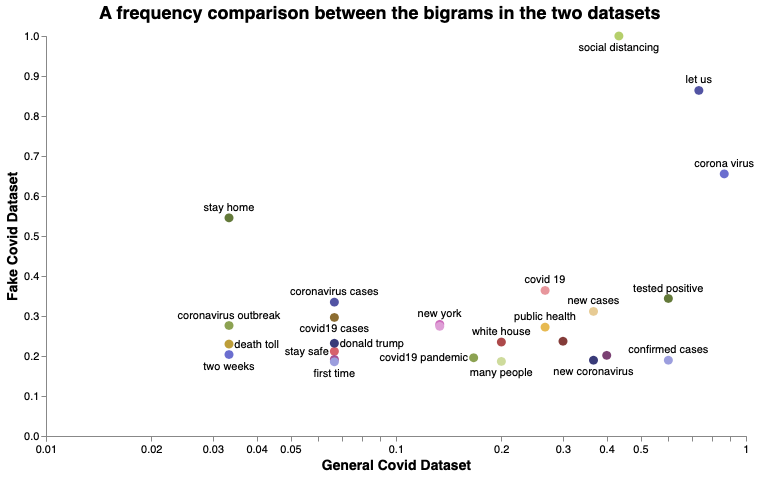

[Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe304zmmUUkBAhtGicfbzc2bVkkTCQIVwhKaRA7WVkwsjQBGTcaWXo0AHYABlKZeH8sNAAWcpkkBkw2CBoALzg0NKRZVNj4tABtUHEgrvQ2BkUAfQGUGWIkABsTCGHQACF-QIRuikUyZaztBCn6NwSYVIBxUzhA5e0AYTZiArRSylKANj--gGA4oyABiSAA1r5Xu8+qhSgBfKRbHZBbpnZowS4QGDaHCKNiYOBQTC3e6PF5vD5w76A2kA4EgMGQikwz6I5EBVHoBhtcRkU7nTFXUniB4rFlUr6-Ol0hlMqGU2EIpEgbacvboUVuKxsfFjd6KHkisVPaGSygAZhldNqoIhCtZ1IAjAAOACcAidPydACY3aULT6fQIXb92aqURq5EgaMtLAg4JkFiA7qLyWalTTrUC7cyM2yVWrdmjEzQkM5lHBdFljenFZ9KD6Lc2W6227bGfaJZnygJSvVA8HQz9ap7veGi1y5DREglfNYYU63bXxfnqdLs-85V211KA6UfbUlxaBLUXRaXWU3T9ihPI90FwUl9oAJIr0319eb+m5h3m8oDkGIa-KOXq+m6d7qg+bC6DC2gwOYODwJIMipia3YNgGbbYa2v4YXCkHFugCFIV4EhdKhZKrp+Uo4XRFp4buhFTuR2jiGEFEplRH6OrR9HYYxNHfKUTrlMOoHen6AZBsxUbsaKOqLsulFptRvHfPxAmdnmNGyQ+yxwEgTgwEZsjrCp6G7hpmm4dpf49geImSf6g7ASOAh6cRpkhPoRgmOImBxu++F8TZzaCepIkuk6EngdJQ4+p5IBhLoRJqBIIRHL0wVWVhYUMXZIVJYkvgmeIfQWXWkX5eFhVMYW95eeV2gQEZdAdA85lcapPH-jVBXyiF3w+i6QHiWOcWJQ1UHoK17FqJ0ighPQ+IMGQMDnDlQl5WFEWSklkJwDg2hGpVal9TVe09havoedNREgDyLVIKlW3VZddXbT6Tlxa541Jboqw6ggZwod1lnbf1V0FhyD3WCDEg6ssFXg1VF35dD65Bk6xTFEebonmeF7FE6xXIMsTzQCsnFoWj10fYN9Ww1OJXPUwyhveju2fbxxVIOzNDOFM4K9FMexnb19MYzz+33VOTDC6LDAIHoupwP4YO0+dUvc4zuly1GuhqxrpxhDOhKKJzmZOpjUq+qU164-jhPnpeSUvcoUBGbiBh2AYsiihAXVa5LmFQzLSpJfAKz0DQDzPallsS0NO02bbwmiaU41gVJg584n2hRIoyNW2HDM7vrzNRgYUCmJguJIDgDyl+u4d65Fjk5y5Y0gXdVfdHYTeKFYywxsELehbrFe8wb3RPAZvQ1snuVt9Psv97N8RqBAahe089hqLoSDEhP1nS+368RjNIAHzQR-EjEJin6nmm20lYSEuIiTaIZxfmM-q8dIzw3iAX+cZnq2GOHyAB5cgGX0nFGJ4AQpg4BgefNekdZ7oDcAwMq2gDAQAYMsNQ0Dl6Q1gfZGGV8HowGqPHRufs65oKnnAzBICGH2DrlYfQzC04RyoQg-Yq1jpOgtLw1+-CCJYJAOcdmhlwTaHsFMcq4j+Jv2kfII64DrBmAeKKFGIcU6AMoeufs8U3KxT9O7UeigEAnAMqQZYwduIp2-FudO5RM7Z2cvFJKARDL11alAZQ1Za7OJ6kYihRVpGYAMHEE4p1UbazLug1hAjGqPRCK1d4pCkmh1blEpm1CpzHFICEHAC9EiqPoh4kSYle5d18dIiphlv4GRJGQ96qSTG0R+LnHu7kvS1CSu0k64SIbqWKIUoSLofgWjdE6X6Aykp+3rlia4nSuZ8Ivmw4pUYypmUUs3TZOttkYMwmYv6DTnIA08E8DwFNql0Vqd9RpVz3JRxgCEGCoSyzLCeThdRICfk0CgH87wcAKbjLpiklhPThIWgPM7U8rsrw3iSl6H45RtCkACrGOIupoXJIKd06JICd6BEJLQKAbF4kSBWACrSOyLmvJ8e80cSUxjpTGJTFoUBwQ4FjDTFxK9pkd1ZUsocvckp+RUAmAK+CiR1yCic2FZy0lSJATXZVlhsQqCbgYkV5DSVFMEegAyQdVa2OOXkyJJrK57O6Eba1w8QVgoZaqklcKyWOsmLoX54pWrmCJfkye6r4XlH9MUKVgznKk2kUGrJfKBVCsZW2IFvqQA7zYPywVBkYgKA1omNNtlmWaszdWHlegVj-M9WGiRZblQgKPhTZwx9wQlpbLUrFRNLwOxvHjY8KzlDIEULqqYiha7PzcX8bcGq9xeOuZK4qW9fDLBzSsENdrvWmoyQQgoddwX7vkHij1trRX2uAZm49h7xRMAYLGTIfIt0Xp3Q6s1IAXDrtILIKwjc6BnsMa+8NPqP38wYDEEyTAaDTpnXOiNnc2UDI5RoqDgtfa6kwC+41b6r0fq5eocURkfDi3PThkDuVLnIYmlY5pbBji1z-UtTttVG3CR7ai-tTsh3SK9ktBuihd4qHibkoD5GG3nPLfhulVad4PFjB0GTLGBqSabZmuTyhjjtBkz7NgUE61n1w-AjJ1g9TlgNIksT6lZluPg0NH4AgBCHmPCi4m8aQEWZCPIIyymM0fu804BgSBhURNyjOm8fmMmyBzS0Ye7MpjrQ6WRrpRndkfo2hAQV8Qnix3EOCJeyWtkSfnUlKIRDf28myAZl+ajJFqY-YEGcvg4CkDHeRXzdXiqCuUFhlqNhXC0NE0alLFH30ZLEAmXL-IGCigAB5N2JMW6rxiU51Kzku-pU0QEzbgPNtKiZ4IMPuIa0L4nauNqjkd-RP9WvmHa8tsV-41veOXdIlrDw7sKR3gfJbhXTnFYQxKzbFi+7qfiIJg7lWCtWaK+d1T79xCpWJOwJ6mRZxVIM6Ix7PYfR9K44OgmKLhkaKa3OH+e3BOwds7UxdsbXsgN20Peusgk5-bVQD1btPLHdy25mlniqXBQC9h1i70iDCC69riNgDza1s69aNvD43MAMFkJYAhv9YDQ+G7DmpnWxcKA14N-kxGaAK0yAoEX8PpEm7N3HHyyiTsTJ188vXIDGDICcHY5YHbqvhbs7u6+XuFEs8tyVjRw8cDS8hbLmH-24dh4Z7NoIZs+SF3gD4Vnsf2fx4Q1zmjPP3Z4ttwobQUCyDyaG6dkbHOA8PTxASNKbboMW4e5e4z18mD8zt7iB4Jk8Ch56Ss3vjcQjvc1truPuvRcM9xYo2QRCsMD9Axk3oC-vmiiX7XqcJliEnF0DNp9VW5f1pz5z+pdPNuld1MjeChliEbOP5acLHY2NZ1xj9YH0Uo53-oFYBwM5N9tpHNahagXZiZ8dicQEi4b9RRExsNq9T9KMygBAL8ecfg-Fj5aEFY3BjgWpI9BN4DndAVXd1N8DesWgPBM8J9MI-dItr4KD45ldFAv5ADFd6Dpgv5FIPhW9Ut0lr5Hxf0MsstANqD5ca9toHZSho0Qcu53NM0Yps0x1IcyDCDJ8Xdp9M0KBNdsDcDvtMhlYqdvx-cxtr4DJdB64ZseRfss8xDECTCHpoDf0vcAMx1WD28HpnDwdLAKAExVDs8p9VMM5z9ucmkQEvdTZcc3C0sMkyAH1xBA4QhHCoi+CHDr9f0a5dRHcYVbCAj50gj1tUDQjM14AGM2BVB44WcyjBVK8nc1DiCND-N8QcBqj+QgwfhkipMMk2iBM4h8QyjOoOj6sMkzdLAysS4eCFcns883kZJpExjf13sqCq8iCmVAjyhEVnNCde00Vbw3tWsKx5FBjOVf49BmhpgQtaj-D1C1ipDSgUCQjBx0CE1V0-0st6NBjhI+xAIY1YokovY3jKYkBzAtdli6jViE9M1xhPZvZAYkAj8bCT9ciEMvjzEXsAZR5+RAY7cjjpFAZgTU8WhYh-4JjxCO5pikNecP1CSgSf4EgksETDNJjojr4npYT4TRCvgbYSCP18hoAMowgWpV0PjPFgj88iiP1vtCQ9AMScTm0MS2JMMH8GSaskTl9r5I83A7Fyw2TZSK15SxAMRdSP02TpTpdx9QSaC4M6CHpJTfBEguULjsjETri8iRSCiHjZiQFqTRiFB6SOTGTST3CWYXiEhEgEAmAVVH8VSXTB8E0FA2hEZHhIzlSVst8owDRxRYAYxzTLiciYy1SbT6MCh7A6BLAsywgjSMlkBLBFlDDNxjCO4UT2UJoMUnQWoGAhd4zKzr4yA3g9F5V64UpdRkBuVuyHolhlApgQgZxCEW8ozUyJCgcecQd34g41hFVR4SF2SLS8z6ibjviZCbleNdR6UuDZAlxhTnsNsC9pESICR4A2hylmgxypwcBmgrVLhFAsjiVnS9zXTENJUVzpFwRdQXBh5XAXyoxXBFEY9-Toy-yI1sZuMtjUU5CJTBVmR69CQKySS7C2C698RsKnBZBvRahtzczfzwTYyQESKYp+QvYrC-DdyqKCyWZ7A+TiAfQcUaBDQmKpRaDuSMl69Z9Fl2jcLVS0zug3ATIsMGFQhstiT5zscUipxN1og1LLyDyXtaMQEwhotdQ8DMM+KAy8KgyoxMsjLBTF4DDxL8zJL0B98KZzBZVmiDsZcEjIKpLo8EirA64bUUzlLOj6C4l647A1A65jKNwjDaktLry+YP5cQ45FADBPL0BBUHgDB4JWhhDYKdz+KrTBLr4hCAMcsODUqs0yjaFfB8hlhx5bKELWKowarghnBIVaAfN6qWL7LP02qywnA8QaAEw6zswGypjRSZjKShKR1fA7F2INNT5cdwt05RFop+xONHY8YkoZs3VwV3g2g-S8qTKJL7CpxqztAvRNLUS4rpEvRtBvpvphrrRRqHIlyrqPlpF7rSgzyLzOr006sEUkUXNtiuM-jFRnwEBhBmA2AnQEAyAmBlIlK29mTCykI45C5YxfDLzyT6dM1mqS8nQd5yqCb64v12qcynSjq7KTqoxSa+rTY5qLZyqd5EqMrHSfzKaGruqExoK+ryq6aTJzBotyb2aor6zrTTq2B5BmCEgdQzNPNyrTN6VPMcVj4wUN8DMfQPFCj3kkolghcOJvBlARDDqsckaWUP9lz-o4zEADtjhIRLymzqMwIko2AmB3gpzC4gSmbyZ7kvbfrS0bjsbL9eN-9lodtyrihcRSMAqzagq68VYIL-au1-qRISYLQdiCdCZdjyUFsj0jpMNLyNjkVgbHYkoMNBNTh7BIRF8k7WMrcQF-RygvqdFqxrVvzQ0OauqJCg6byQEW6eKExf0vZEhjKfhlr3QxSdbrd9BQVvYdESEmFMdxaowTwm7FUFx5M5yY7eC46pwMjWtu8RoXQBByqj6BAC04gvlyrvN6AQh3g4A3BHqZRnqVL0y45tRrAZtYlFLlSBKGiTNlFv69B-BzjIq-767ISZ6vYnADBaAJAn7ZQadxqKSy7yB1BvqEbf6Cr-7+Cwa3QYgrgFZ7AEHaQX7d6oLZsoBVg2hSBQgAoHh77H7a6VN-zXrmzUHjpqYk9yojaSGcxCqHouHTIjbtAN0EzTNCR2g+GfwBHXzTJEBQVpzbBj4DqKLO6-rX8ALP9pVpFNywhoh4YEAZt2ot64KFyyTkGcb0skBtMvyG4f6zHAq9xkDta2jdaiFVIIzmsg5b1cq1H4Ku78Kpx4zfHC5dRIRmNMdzH-wBA3RahihDy4oni3dIVjosK0phSe7xSpqG8H4QnT0-GKaAmNGIGP1iAPGxQvHFU2gT0a7Ead6hjr5xBzAaUFZVp1pIronkbt9DJ3hwFBq7BFt27t0mTX7oIlJvAJBqhVGimumxn0AWh2JEsWo6Bos3BhaO7imA6ISeTwnOptBDpUFmGkH3TJ7PTM0D8Hg7ACgTpypWbrAyB2JOhhmwtsHSmMkiQJAbBLB+YoByrfm2IH7OmnHvgsm85pEtQ76yxLyONwCNrnY-EQrQg9QHHDqtnk6cG69Wgty21+UBhrDHHY7GmHpO88W4gDsYQ4A2ByrI99qaBaHpKHhWlyrRR9jCQ5MXmztjqO5YrUCkp2XCRf1aX2pSBT4x7-qLRQCEm-ieKoAiFyXbmD7qwCW0W5nyHugZslW44h6JBP4ZmRa1XiWpx56uElBPAv4Np9XNnDXipglzXsQCRFFsBMCVX-GbXpF70janhPD7BUW3WnGZUExDhTALAmM2brWQW3TtLe7M0+N5xdWwgTBOWEDuWzK0RE2pSSomaD8aSXoLZxA2B4HjmU6tHLadH2FzC9FC2nBDxT7ahTZjgvDyqfWx0pcGNw2houTNGwXzmP1I923RH-VQUBjfc3nXSi6gb1rs6wcFXrnk2ViSn-ye3Jr1SYxBCbA4SO3gNAzunzL6NzcI9o7CWGmVkVZVhh7yrz2ZahGeGt2uWqagmowb2Wc111ZCRyrYkXpQlFF9bamaWizGMjYKZpcGAjn6nRn1X0BFb9QeKnpE1Lyo0fj880KMlUpIVloCQa0-XZmA2YlMOnKFTbFjb-WiWEd2pA0D0maD0f5-U0pgWiXQXPRvp4XJ3IDii6FmbosMdwOd35m5BWhfAwgqGVdXWcPSPpEhPVh5Bf1UpWtyrnKIAPATJ+VFF-FTHVXcOaKZwN7W3ynlhPGFNMBsODXNPM1vpsU4BphWgFaetZ6nhYS3B6OT2brz6vdjgi2ozwHXTXQYozmEotqyBZttAUDyqUC-AKZ1AFa8HqnI8v4H672U2H202Fm9MBt44Wk5wsbLHg6QEMvv4s3R3qcU7l3ipPBuL5BqXi3NG2HqNdaD1ohfDWpy9Lrmyu4-iTJDgCH-UYwCFr6v2euS9YAHAFaYAHADnAh-UrWRnePIPMl2zmiC6qubjYW+0WOCZ3ZVpmocYlTj2IOjWowWd6X44jYD8P3AhHE-1lGNZyrhBG4jIDdtBezWtxABzT4u2biaukOV1Br5WpTotfDd5r7+sd5QVDakBHFpH3FZGoxP2Lv5APd52wTF3qK+dEBTJ0bctyr8hcttBbu7ANnpvTLd3xmnx8H8f4fQU3vwtxW2MlxHNXHgx+XzvIVycm44uwGx3c9suY2eS4hYAG5wqAoaX4kuFqxaqnO9uAYMaQgNpkrdRm2kAOurhP2srMsSryrirssL7EerjObqbuhvNf1i8JeZu7Ybo1q4WB1agV2SXJbu9seNpnyludmMkHfzgbtTBMnRIXRVureXNQdjSHdS98TyKxPnP2EhcbAzh8Xf15B4hYwTeie+O1BfCFTHPC7AaULLfp38NpcQh7AdtIVyrKXogHX1maXmAGNFU8QDcAp4kylIfZ1l7uhfZ1c6+1AylFEIAfceOk-ZuqZsAmXf0ggJBQ+TPxPcuqWWkYKxAM-NiwDfec+qzdRA1YlTAyAihneUf0t9298dtHhyr98Il68wkEyWCt-Gq54juQh11CaL-cocZREM7i6l-TDsXH4EuF3tmENeXuckogxmwppZQEmHP699U2xPdAObl-R9hfQxQKLhMx9De8nQTmFlp4F-SEhHk9-fXgs2jyPc3g5VJ7gWjmjbwWuTtI8uSiJAGBAolgMIN9gi41EimXnbfgAwmYMIGMSmJetDzRCu0hUuIDaIHEb4RYS2jtJDs7WaT8CS8wjNgNwTAFJcIBN8HhtIN-S9k9MFqAgYWyOAl5+ilKEEiR3D6ZptBImfkBAGDSEgj2GnCfpmiQjkREidAR3lN23Z999uUlOwe7yHK2JdBYfSXhJ0RzDkEkiQSJrIL16PtoI2gShuVUoaPdPA5VaDPyDEpBDAmyXT9HEnyyp5IWb3DxIh0SY6VM0kLAhlEElp9cChv6U3IEFoTmD-GTAs-Kcwmrvx2YivQajEGxKFdoqXAtKvHDEDupCm4-fQRKRzTgpB60LAzNeCK6096g9sNblnX5Y2BdQ+IbUJDXVoJDke1Q6Ntk2vgLDfAboTfksO-4rDryawh6FsJxA18amn-JHrsO6oEZ6UTweAPiHU56DvB5KF4o7247b09uwkX-vnijhTlms9DJgC4A-bEAIAgQTIK0CsqCZPBPQx4TOwhGp43QqILASEPQDwiVYyuRYW8NN5-EQqJwFujyEi6IixqNQlBtImMCgpwQ4CbEJwhiEEgWgZ7DiJeRcYelccIyA2sYF9L4idhGLd5tfBSj7YhWU-AyMKU+5AVJ+ZRfNG7yd6P53u3nbngcKnASjAk5gWwLSOMqm0GmoLZjn7yz5uwPWvpR7msET7gC+OsReMtoAU5E0uK2qAKMmV26Yj9ctca0ZYDfIRkZw8AHXsxWWGUYSuPgqhi1CVGqAN2gPAkfIJMHKjAxoPE4f6NpHxI-mwYvjgkCjHhiaUn7L+HYiDgciMRTgj4W9T-4xJAgqYmcugwK6ci66Lva+KzDsDNc4xpib0U8IVbwwa+yEGhmcN16JD5BDYgwE2KO6CkVczQksSw2YHXwExYYkcqDz0r0sCgQWJxFlyJFWMV8SwfFFUxawHpdEpA0QeQNja6sVGYPNWmPwjYMc7iLoWoFqIX6v8Hon7XcdX0wyicoRdosIogDApWV2WMLC3ov0zorpyWWSNaOXh3iGi5B8Y0MQGNHF7w4wvIoZnQ0yAwgpxf44IUkKMb88LUMEtsZhBiiLJtGgyEZKaLtqQpjO+49UeUBW7P8eMNFd7OumOiASVRa47IRBGtwZB2o1wqXB-CQmejsByQ+RGs3CCGgbRFg3oRkliREIfmFEpMf8yEnAScUzEi4axKBE+wFAiY4CTSwIRySYx4k4viEC9yyBuJDwu8ZmnUkUilJQY-sc31mj6TQeGlasc4PQAqMpx4CFMRADsQOD72sE+QYYESLp5bhWPNyelwFEtiPRkknljmK+HNJvJYTSUZmKNGzcysiokcRJK5FlibSckkIJ-XGKGSS2woq2n3SmA35MscSd0ZRRYmRRaxsbWziBJoG2BMMxGS8mlPLYVoc2A5LDgWgtizV7hXg7Sf5lcAPAmprktLksS0lODSsnk4eMYHsAm55Ie4wnuFIskgAhp+YkhCcE7yJBcp6jPyUkKrBI4O+dpaIeZNK6+Aj4dfEHrGJSmYspwu0+IPtIbhDwRJJk5MfmIgCJwZxqw8FhlMgTtTvAHBJRKd3Mn5EHpvbDJGbDUDih3Bo4jzmFP-GzcZsooU-r6wx72DBBZDSaZ0PBRo54gZgSER3VAL5RcgkiFDkONEnKSwqccAKDFNLEIYJ22onYrrTpKV1hAuoUspkzTpEStiZ418sFLc7qAiZA4y-sRH6yl5sWqAigOtPARfs+RlUi2gFOHSmiW6TLVcQZitAzoX8axKZCGDfHOxkmfONqCz0TgzSfJeU5afIM1nEZfAFAAWEXy2nSIjZlYJ4J3mwDmxo8yYEGU5L45Wzt4GA0eA3HlbC95W2gdoFkCmaXsmggQUvEECYAK1pgBgBVNHHvwiyJqIo4oj-hxD7Ugso5FoWLRLaFSwMuM3eH+hHpRyKSMcj9GBPShPRIWyAWbKgMc4lzvAQI+6fsMemZpMA0kuRBCHZlGSQAm5PUVQzHjNy2hIADuYNTUm9BtZS02KYOPHJlgrxBBcquXV6weA4A4IIkl3KOlRhigOABOg5MS4Oyaxso2uRKRoCzZY4e8U4KWAJSBD7ZyE2bj1x0SZBuUB2HrhUnu7-MeKd8hSIKiYD3xMAsAIkOCFjiz9TZWqZWISisCytfug89FsTM5lpAngyAvpA9V-nyEUCQYL6k0HoA0zOgC87kQRXpYKt-uoKVNLAuNJdh0hnqaURGgSaESICNvVSk4miAzYdEIPZXNymI4tS+pQUsUb4B6lMKJpwkKqe9S1QrNIEuE8aaDPhkDNwEd8kPjS1Hgh8-8ZIxOodMDpbyfp-BT2NXW8D2gP2XYFRhmLgpVDcoR4ZsDXIoWGwuwg1TdkD2JAAK2gjzOIOcSo5WKmCdpWJKP00kcKhFK6PUEcEsBo4EZn4mIbxUSBOIdQiOAemgrilTgBA-IQkLAALbroyAAixwZwqjYGLDF3Qd3N7AjnbDT5+Up7NwpQwM4IMn9FGd0LwnQiP0BSsFDlntAhKR5U4eIJCBCAFt32eCoSq0DaBVMhZxIDgXItCVyQH6EKKJfRj0x9jMlusi5KTNPEg0PW9gTvA4FRFEgYABbf4iVRnAVCXFG8yaZEvmUbocqyy7inbNtHMKwiRkMsqPEGqozBFayjAkLiwLS5dC8QfQistvEHKZ29y+CILQ16C1q0xID+fykP4qNvlCiCpFIyaUd4BsOoHkHKyBVdLqlRi8xa23viGchl+yiaQDGPgIqS85gewAT3iWuKxc7AW7hBJ5Df0NecchOK4DiWOSz5e4MhZMKShnAckESiEGcuxUXLmkNcJBWzNLw0B7an0xJQzxZHMhR4fs-BHir2VosdFrE+gEZAURPcq27Cx5QkqvJ8qNEMYcBG-I14rBdA+o4afQxvHFLWpe6JVN2NBhwByV68yldYkuDBofYMYBaXzV8GchUaNKUDvi1hktznVCrVWpCjFBJzPOnPcBQcjLwYM5+xddauimkQbDzqtQYNZO2z4Yp62n1F8SXRPEYpzO6NYOcnJGotz8gTAZ6MrlHiXAzAeDXxTYwUzew-YxwcYELwzVPUW59Q72RWqcAyrmCr3atc-RObfTkl6AJtS9y4TyAwU0nauUqpATdqByz0GQcMuHmrZPhbXaRH2GxRhBIalYKpeAtYj4zF6UK1bCIMSYrIReCqaDqKt6nIrbyJKyCTOC0U8SSlGSOdV9Quk8rFVTIofMPD7U2JOlE6sBd1WfXDTuUWckBe6z7pk5EUpQJmlvCej5j-u8nX0g8CJLAMUqwKh6K3WayGhyii00BRzO6qGDv1PgXor+tM4fojGu+RQiap-hBty8ZgU1V-0nXdUbawbMjZ7S-I5zAK6U3GvYCN4PpkYTKilVkpDEMNh2MvbKurzvVpyMkmvcUKPFl44aDx96vzsVDoCJz0GeXCTfhP3Dz9XMi-FZJUl8AuBPyim94byofUetAg9aumoMIPWrLzVt5fjVr2o2kaLADG9CbkszTWaQ2lgKwl7yzjKz-eAMWID+2VxYd-mxIayZYEZzeRyqwW8qMtBCotqN13VJ6DWmlwcazVXGvjqYANASBR1wlA9Chr-Wbi1oOIYJE1mXXdV8tI9PQIsSi5BK26TQ9HDpv1XXwMyTwHAKKH-nsRTN8qnFblya2gwx5MUKLrYHxBpiDsb4ODZQpynxhSwXsQVuotSH8hFi5G84ZRu7oKLO1oCW7GGzs1lseFuQlVW21dHraxZx6mOPHJA2FbWJw9SQUHH6HksUN4qpESAGfAgVWQw2qMEFl8AbCbuO2O6lGrvXTqNxH6Q8HdUchUTo2IyT8czlIllEByHPUYTcTGWqbyZx5OWrB0SlFqNaNUeWeO3PBJLVZeGo+VLl-GDr9N-65KlIp0S1xqYWW3DRkmaCK9A5TDaLadokBk6DIMnHir-AeV6qnlH6L1bCszJQlWtHOo9SAlZYdC12mTTUchVPHTDss4CGJXZ0vY5o55ZpAtEsFtIU7JNQm-goNge7y0eVboXGKNHXGiJjikM1tqrWmDksP2g1HCeTk-aZEwgvrULXvMCB26xgputTmrt4lDj3d2gZsAmqe3dBRYqge3Gyvx3+6HKRCQEvNAd1h7QEBkHnUgiCxazmpbWllRHzlaUpfAcJAwLqvOXmb2E3u3bGvIo3vrWJhen3YGEB0x7aAtDFQR7t01SbahZswtjJxjAZKkVQiz4lRkN0rIBO5SbFrFxq2c7mlO8AfT-Dj3coTtt2qoq0DoC+B68tLZPQLva1WCmivemSbinWkKSx860w+QkFAYZCS2WQ6NtjI8KtJQGiiK3XXtN5fSklB0WME8Ca16hJ9SQ2IIoHyCcFv0g+wXRc2CxmjINX5P2vTtu0KcLY0GoyAWxoWL7c9SW2brUq8Dz18QRS6AyMtm77qf4gqCngdIZLELVssOpNUzKappE+9b5PRsDPb1rLQW0UJkSGGW2tJYwuqZgJDX5k57mVeenSbjtd06DRWMe5WrtnNjP6HIGuh6MLuHiB6i982kvbdv5iEI7GWFHNO8Rj2u14+12QhJ2SDhY8iDldECr1paQYDPFNge3ZNsE1LaZUGBhRjSnkBq9GlQBwkR2plT+pMMiie9ETWEA0okAAgN-f8w8PagEAdOt9WhtYnQZiEmVE4QIb477rlauoCgE8xYOcaUDk0qI21GeZ-5pcV+ofZrs8D8Y0crSL-cvrKZI7Za9KCAOxB+Ux6XtxGnij4pj0KMM9WSaxQAbm2tiYD8M+o9BtdBE0XQuPASe9vAR+6bDPYCYSeLh3-9HIWh3IxQfKA5KA+GSY8WvS1BlzycyeK4ViriMLbbtu2JYzpgd44V+jyW+bEZDP64hR4oA-wy3JGj4N5jMerUHQ0XWIqL1tWm0srnNxZINofh8g5SuzGtdftADcMkYMKMwdeK0asmRMoymI7eKAmcQ00fiOcoZMRGVrKYrvV4HQ1BB7oPFgHnDxR4bTY+Y0d8lrGkhmJlfrFksCih3A4TMI7NxJNFxwQ-csYOXjSPf6P0iEpw0hshO4nJDSQ-mCyasDTBuDux2bsgjcC-4F4vJ0493NuFsAS8HgYhsYdnE5dcaJxf4lAdYPNGb9Q63GuE3HmsmdZeJ+QR-CZYg9U8CBukv+wYxja99vXGU3YdxLJ5jgJeSzk0XGNsGudVnJuKrDla2qY9yAD+NmRODUymA5JyacbM1UrRDI9JjvXpuk3W5lglqkIJcwIQp8rtxfVWgbVVou6xpyp+I6qcJ2Zo9T0tBhd61LA2U+Tk0wYcrCRg2BoM-O5Azqb46G9wEsiFIUCfGWl05iaRHvHKqX2p6rB8cRZYMFbWIMU6uOcXZnSJzuxB+eKRGLtlP6O7T+F9NvfcazHrFM+zZsNcOpCoVFIUgB0U4vO6C5n2AygbTN+q9VLBYszbe3ZlDFAAEY932YuAkhwAur+zpDN1fednYHwfQdq8jvZ3HHPoP2M83rApokU5HWq0p4swDAj2TNZsoKAZbEsP726cs8AXUDie1PsnnJD6TNjYrvVTGtqL5qUqsjEQx7Kk9cczk2bh0gmzO2KG82XgDMfjbzz6JobEcS3Qmbq2KSbLBtAvSJWLDiqgbAA-ZrA2jpQec4evDMN7iRICUSL-j7UPj-K7x5o0lEkvhl44ryTBv6TVG6bUJjGhpN91bQrAjuia5E++LFzm6ng+WoajHpMu+BCQCI9i+wiQjlg4gn8AdTHugxfkQgBgOlQxeL0BGpDRedgLvFHy0dkcIp7RX6q9EmGIWvSpS4WuIB7b2GMSW4VWDViKIfLBIRRgrR0vOoWteA6K3eupXJqm9xAP9FCnKpf1DQtgJ8Y6dkvW4g2s9Q2srDA7bn9yAUmdVp2gA8gz+o+WwCZEfIJbPLLcxALZe6uGmUd1llfa7X5jgJBc-WGIZ8wTACgCQCvZpj3lYULVx6I4BZMCb11D5WFMFUbUDuupQFMpOrL+Aeg7PVmULoy5c6RZbMZTjrUtQ2uIqr3QUzdGe-zenoVbiBlYYFai2bJcSR4mJ-7JiedRWOMWazs3YgMdAMjsRL2pgdDK7X9iVdizWZyM1qjhuJhoglKdyTHudFV9Mi0lhcwyYyS43h4JUOqiNdKVR9jGRnbQNNJGkVXMzIkJjhAVY5yXXAKq1y4ZDtWJEyTGhxQNSc+11ssq0wVUdT2WoXhRI+BzahZqFse9XCMe-BhnjOBgp+UI7MmzMZvXeSSL+Bra9Py+2q3r49bOVsEEtbfWQEPwRRAgF9AIAfgK830FZYavdLugrEQvYEGJAm3NC9wTOSOXkyMKU9Tp1DvRnXTv7jBQQFpG7banLBaEXmI6M0CQtDzzrs3eQG+Spua4qwDtLvdut4xVVNVs1G2addebQ7vOCyAQF8aN1zENo4otIgftfxbq0SzF9W8tZ5WiJxb+l63juqkVjBLgkK+29Cu6DfQlrLSBkXcQZ7Y6fjFl1LhniFF45Jho5vDtBpcDRGWWsJp4HrTVqvqZLTFjzMmeWOXdrmjzULcjAeCqrVg5VLFH-vYqa3kT3+Q7bplSjpjrhUO1oa-iwvWnylAGP7mWEeYz6w7UWD+wW0fIrNpZetuGFH0RiAwGAYupm2TJ3WWo25ed1Y-HcmlJhP7Z0k-l2U9OYEOI+fAK3U27vgKCEa+XTPPmRxkH8beR8bDmx+YDUkD+dx+zDsuta3rcVD86u+cfP8Nu2YV9hI-McO3zFuQD1Slw4roYa2Z5VIRxlALSrIotuDj9UdAPijrBVBFuy1Z0CD-MlH5YKed-cDwDyWoMjl69eZ0cKtPyZkBSTBHjIGV1oBAnEBjcKEx6rHFWaYOXhIdCWuzEpex1SycBgo+mCtCcTcMs0+3OzHxgCE1e+NFVfH+8VqG-qrMZnQbk0xXoPX5i9B9Rt3SlOVrV4u3LAPgGmUqe2g3b-wPoaNDjBHPbEUVTiTPULh5AyYAzANFTQw+2y74vbMujyxIa8sv6AkOIEM3EEqcETXxDMi0Kg1MwVZP20zC+7GsmV5YTgh6cKho4egTPu8aOApTg-XvROkogG7FE3DEBTPt8ysNqODjpprsNnT7AoCEE7x5Z9n3QYQBkEe7X8-ZzlYePoCMhTosbm5Z1CrHn0CcwzzjlfM0V0wL73nftoqiSoISxdXhizhB+xm6eQPenCaUDm5fjYgw6AhIOm9E6RuN6WrdJeOB7k3aSOVL3acFzSo4tGRMXXCHI6c-QDEvqmsSUFBPoJ3I3ISTwQICS7kBEgz1iMeGFk5BsIONurSdepkUnmfM7Gi0BG1I9YkCug1rDmRuw9lM88WBpPH9Q-ZTlsY-QcyHp45hB3M1STwpdOn6Bbt09QaZmCLaYF+eVW3cE6UrSbL4eGw7kegbPUKJDXZ9JbhyxaynzZe9WU6J4EaGQNLtekkA+xm50c4fpUinL-rkIxpt+UCqwgPfIV7dur1sKqwH081wPEjtG5D5QcTdgy4kBQIdpCmH8zHrF5ZB2bbcw1xvdjnAdzbEp7PZ4ArcMvnwbAEWLHdQ0tzo4d1lKKsBDaIuOXPgsB629Ea1veXZBYLifRj2OYiB+W1QOeqcd-PpnscMonTX3Wuru5ytSUpZmCsF2e7m8axUmnXdzudza75XLGZwuDzVL1+yY6LNitap86FdELoO7NuWGR3PqyNxyejNAl2bmWOjs23G0G0ThEVBY4QhBjR743s0MFIem-bLiT0DzqUSLeEHp3a7fdGAOumUAKRQRkF+QFu-kWSu5RB3dgEh98BsB2gXzDPI3DrfZaJShkT2ozRj0xw9E9fCy7cP-TOumnDbgJCcATlr3SHHzkFegJrd3YP2nH6IFOak49X6P3cvj72NTwGBR4SeO9yC+afyCxP3rnTA5ec0fsDXzmw+ZkD3hvu1PgaUwYgBQ+sMT3tXBNNp5VgGBSRFp-9yABM8PoCEldPU2MEAf3v2x0XYrVed9UruU454P4BtdXNFSz15SewBWrqmy3zP5assIF5+aBXaZ15-HmWBctWAGXUAfPt3wZcJA+bkNZxb7aNd85QOB2WITEP8DeArdmTDhxWm3H-KVbDni5EIeNal83jrHid6pWaasRwQBbWr+O5VMiRveHmwnNMdwYUxG8sAOD2wFJHoipPLcsQJqrsBEJBXo31Kfp6+5N7JaDcMDxV9m5khYlrPA42O7M2Zeud+x464jCfkSLvYvQJYLogZcBD3gjGDLWf2JXX3MgNcU8zldxd5WQEt-JK+XjUE8ri71vQp6hT8SOs+MlYQt0s94z2AgfiiS1cM7U3SJWIkqk59S5RfFFQniU2hDXHkDEJIn8D6T3x25pbklGZBCqTHoGblSFUSYGJU-GvPbOoZzHyT3V52-jZZNOmdJsQ5OMzft3aQQimlA5V1TqHWPluTz+cDTAT0MQoX14HvS8g0H5n8X5g-Zs6dCPlO6+PvQ+y35Dtt3+-GtqiYgsvQQYN0C3eW1xtgGdn3cb4ravodJmRJBH6JbrmS0aSIm3n+y+x+by0P284TaE6sr+oq7NxDtSGA-H+pXpzBRp1CaRcRnEfpS+wK1WWC0AizK3yabQnWh6jb15n3s+WAELwCbmN9HbnT-ptN3nvTsZbRn8maYDEbOv7VwTDY4foR1ovFVYH7ZOO+9wSJkZ82mr86tnpehpT3pnsDupyAJHyz76QZekb0IcrBZ1n5B9nv70j6PAm1BY3nfov0-wFjX+Qt1+EchCXfASUZUMCMvRbqkuv-ooBupRHiYMFVJ680JqgdDfNkvbtXn-8zwMNMWfzxttet-JmAoIwHghbPgbLr9n6kpgbTM5XmalOjeFPAgnBHCv9CMJ4ESM5qdnTOsl-GH0OA2oOyUVRaADTAX847aAO2wnAHaj8coAluR0QIZQVn7tPvYL28kUfYaUWwT5Nn3QVVKDIAIR8+OJGzZwKJYFWALdOW2xRCQPeVwVzPVgLUB80N+UQtLfOcWvgeA1tipNyvcgP-IG-aHxAQ+7M7V-8a1VOWK8w-ErQEIfqczxPBqmBfF5cV-euF-h4PMgAZdtAvNzHVgfdt3JQ12SulJF5Hcz2QBzAlPwTYPrOjyD9jAzcTxQ7A1y3BkBPBwNQDr0NwNTwFRLHlcF3yGvg31dLT0zP1rPd+TYBaEYQDhoGAQwDcBymYqxo164ZAHTEgrEf0cC8NUMm7EGzQ4nQdrAnmQm1kA+t27kXAdlUcpuKCmEx8HfFuT6ZXZasnl50HO7GJsn3Paz5YE0L5gDkQRdgHKpG6YjQqQ2AZynsDa-Pq0gR+gzwBCAEmNKxK1spTaBj15iQ7Fcp3-QT1fxcYKeyGMzwS7AWCkrcwEh9MLObzzkqdbUEvp2kSnnI96AY4JpRt9PQI30vMe+Rj1YgBSHmc63HJwchxA+HQykv6J0WOMFeILmDAgNGPV+D2zRwBpZOoRGGOB7JS9lOV64c4H0oyAtIM8CP0aEMLZ+MTOCJp51cqCRCGXRgHLxvAMqGpM07H7RP1XyG9AVQThFcS1MUA9tVv1WVQtFqZvAbEArx0zPn27ksMW4ROAV5GlhedIAmh3lcKAqMBXlaUZGWm84QluS5QjIaIHZCsbF50YAsDUQNXc0gaUJklThKtXM9EBA2znB4vdUIalhZRE3odL7YClMAMVVRXEBtMFrXUVjQqfyFgvye-229H-DvCJtzqUaEP5jYR5n2Z3Vawxj8d1QXl6wlff2F08EMb3xdBjibUDX44gSHX+YHAXwFcdHRNK3oF+QdbD+DzPeMLuogwU+iDBtAOpCdBuPaXRc1xAPvBwB5fSwQ-QZsPMKdFRuTLlmDMiPrGJ0CBJFndxDOAsM90HoVNVZlHHG0OD87iKDyXRaVe-XQY61UtVZ9hQ7uVk91pI52mBtWEX3B9fA68w7JT+MoKnMyoKsST8o+A138tnUYfwf9R-JwOrBamP5FLIR4JoGBdBw9nyoYzYA+VdoLvCpxEd-TBhgqddMac2vMWgCGwet9-EtlysJdUGjgh09Ntzr9O9AkL+JziHa1DMGwy9SHFlgUbXJx+DPgLlNGTXpjtJAPPFFCR-mWqnf4UQy0ypCxLCzmwcjuDynI9b2GWhFhlgZWzgcqg7uQIiiIwUjKJjHddD5ADsVzXQdu+Qhw7JBgxfxbl68IhxLw7ySC0qCP-XkJSVEINgC4iITP5GF4IRcUAEjzAUjREdZsCSK8B5AX5HJCig9n2QBDuZQXB5vwykLVNdmYuGH4qFWCxdRAleHgHCNw9IOE0rsA7BAMoNLc1lCU4KryjAzgSlBsZuKejFbdQtFGTGA4mPAnkQ9Aohx0xEwRPWixQtefBY1xQ1wD7NzPOaCtd7nbTiFDKhEK3IRFqDSxHsBA-MTBQ+SFqFgBC2e3x4iHbc1Hf5nKECw9DpEfKOHhfQC0W0BJIGACMD4QviX8BogeuUBFtAF0Ci5BmaIGQEiac+g7l8QBWhsRogFQHqiY9X0EBDrhYEKWgGJfqPM9AYaXFuYjuUaL11SgfMKQjkFXLT-0NMC32qN-PSwEd5YQ4yJ-CQ-K32I9JyHkAmsDIUsA39-Henw7wTow-ECVlDa0M39NwosLywWvdAKYBhADJjMsDwnL3XRrHczwQhaAGGxpRkgvEMetj+Mol+4tve6NBclzapz1DcuMGNIN3HQ6yh83gnLRvxrACoKxN3Q6yK5psyZQ1JUjOJmhegyVKrWRllvbGMW1nfRRQegkZe5x2kA7aXCgipXTR0nQ2nX0io4guWamaBmIikNm9o5JjQ-RJrWa2CQbGYCKPcRLfgIcI7BAUkRQYrAzxAREUemi5iZAttWK56ZCF1PAUTSARmoUvJmku06XBQCBdTcesL9DVsZ+3JQi0YfjU4wwmx1cAOCV6UNtFgjwJbllcB2Me4QqGsICRcQSvhODEbPaIljXyb2JpQqTTEPNgaZA+TCAykTACxcjw3iPQBFkNehbDHYoYO7l7vNKH6ZlGE+H+D6gJzFGMLKOpQ9xr6GGxLwh4R8j1YRo0uK4RAZFjx2ixvPWMBZSTXm1HpI2ZTVtcJA3IVcBg4n9n6d3A5OPZ9+2YdnlQu+VqAXwe4liO7lBqEzSlJVpd6Nc9aHf8hrsuw3Rg4hywRO1kc64TAKicTI6+FXjBMAX1MBTPUWPSM4YDrh-F4AaCgu84CDskz8a47uQvizIK+NuY1wmbCYDzPGbCfiHSHzQZd+42uEHjKRIv0Ki0A2fV-RljZWIHNX8dS3s1PQF2jZ5BZaLGQ1F7CfQFDhHK416UkiMVyh5wE4c1bjNYkAEcJRGK0OIj-wZ4IuQF4unBdoCEwFla82wreOENelT5gLY7EGUJjil2eQI+YdEAwxpQ-YReDIAuQpkL7jhpTIB4SdtXeA3i+E2OLSAiyERIf0H6DXjf89w76IjdyYqfSHYuhBuEXCY-ZF32iMkObChDkpABIMEb8N6KWgTVG7k6giNF9y6EmaXOnFAygQS2oTqo6+FsScQcAxmjwnQ+IVVbIgeAA5SodoMxDfEvrHY07o86NtDqY1iDaB8NZGSpYjo9xLIceRL+DUB6FUALB4r5CGOCSHo+cRVVxrXwFIBaEKhm5jFI8RJyTQUC1E5UxnM6KwDu5DLXkAbojiHs8lEl-RjtTiZYDF5aqddX0SudEjRU85oFwhiS2PG0ip9W2URyTix49nwjITAEmM9gFIojz4lmeHx1MtfY8WOgjXfWawUTR4nmIlcrTV70LZptP0RHEYxMuXz4DISnA1pakRkT84kowRiOT64EvmBDtrBQEVMqo52MawnAUUAKj6k+QVeTh4MoW4ilg8RO+TaUCgFbDIYhxMEZiAJQWptE9Wm0Zj0PboBptnAmNx0sCYm2MRSyyeAFKMFk0hN+J8XDTALQ1OQuLU4sqA+0ITfknKNwSZKVqC+djGVrH2pekgJ0WSmY2hMc4ohVSEe9zPDIGQAfNfzUCQKXTOPCieU+uAMgKALKJJS5QwVKIwWfE2If5GbaezPBy-T53n0jaKeLMM7EaCzl1qjZVPYBZdA+Xy0LYVJIqTjw-EHiRywCAE-1TQ681NSx5A8Ipcfkp2O7krUkRnLwiOZpgIEOpI5TbZTIE03R4oAToB4szLH1Msdo7F0SYSb48BNYTFfQNKr5GAPkD-d2k4TRmwDgH5mWBjnIYXM8VgZNPLA1OMmOYS5QloDHD4A-dSHIoARkJIj2fDIjsZeQLNJDTUPTZMzRO8YDhJoBIloNzETA+aA6g4sUeDv5zPfEEGxBYPEj7JiU21PZ8+0-YnR9aEQuIjtBYACzQjNIoSg01AWOTmnTszfDEWIDmTwHqt3kyrzDT4NcCwVhsAQUQ+jh4QH1pSLo23j3TfAEQ1QF9iYU3UjXw3PwMtdKMETctsyBlw2USjcUEZxjjauPsSGPa+0SA7WJth5VD-PYNDBj-FmEoFWbVtng50EpvhLZXgsiypIJ0HZT-SqBGNI3TVvHyO-Vu1eoPM8sMpoOfDY0uJJEZWXeL2B5DfPzWvMJ0RjGsBkPRdJpd85MEXNEY9BThWihRN0CbA7XZ2DlTt46Oypsjg1wB9isGNz26o+MzOVTjYVSVNYkxM2LCsBRuFz0Ey54uUKG4ZwU4DVoWgbEAkzbtBAFUzWgHECG1zPWHyNwNM-8GKA-gRKIc0JSLgP3hxzR5O7kvYMqzA0a0IzL1ka0bRwSAgUtJJoTXyFpVNx80KgTKozLAO279DKCeV2C+Y6qXQpLKLMhoiGXWBhY0TgdRwOTRGZoHaROnSQmkJj9b-GWBjoZ1HVg97HN2dDwgRDND0OAorN6w9qdqHKTN4kFKnBysnFjx4OqfTNo4dA+bjIJHdNnhK0p04LznSGlA9w8Qc-CW1bsiok4kmjgBG1N7jxEnGD6Q5zK+ixtOtKZjst4TdRLQyYnRbLn05ss1OC91sseQz9QEp81gzdQxvzrkrdds3YAbMzRjfD70zNAWROjevE7wIyY9JCTqvIThXFGMfKOvjv05kNwFZte7AxTOwshJJwHvRC0VR3LRe1msJ4o+Tb9yPZogpFmg8jyoUC0CAzqTs08BRbRv4evDF4b09nwYQa4MsClJalNZIKTSUjAOMsyoUUGnENaCD2PDouaskyYjwMzKgTpEGbBr5a4WpgOxGtSzi60xskZLocYYw7L7YtslP1DpkY+DIyRfQY+mxR+6NulC4VnblwPp8k6ZPDSdObvHTpygcqhVyvqHbM5tpdG+WaAkxcjLZTzYITnrgpsF9KNxR8ebFaAMLcz0ZxLczKgaU74Welp8q0vTzCzNtXPkPhHc9Bn-RoUl3yHFBUbRymSFfamKrAmgYhEPlkFIxyr0NBfNHt1ArTHPESLxHES3FeUgjOAc6+B+AYQYhMHyMhzAo5MfTY3Q8Ody5QvEE0VGMAVjV9f8YQO2iKaQ90XMQwY8Ql1hja3ESD7dGTPYDU86r3XRwyMeRaBy8CewCySrK1Ujw9WYSJj1c0hwDB0DTL9OBSnkg42ed5PaXGn8FjAtiI5G2B7PSSmmYchRToZHYw7yowI4DGsbhOOU99x2QMFMz0JMC1bQX3OZR9yqYqcEhod4UnSk5IcIUiuMdMXoBfZ1DOHIeB64VIQ0knguKNu0-88BDRxYs+jTKNC1CrUHpKEhlxzsKUK1WJyRHFRIGEj5W-OW0TNQ7HKgCAvfMdtkC8UAfNwojKPox6lGTHyAaMhZLNiczXwRv8HgSxICyQYWgvBQsSRLBiyFAZWF8ApM6+lZ0H4ZgqwBdsth0asS7HIWXS95RRDWhCVS-2jx-ALt03YUZeXMjZ44n3mVdQMp9hs1u8KeSx4DZGTjWgRWePNJT7ABAE2jQnDXjd94sfvKl9CKW4SSsxg-5lgJpyeoXKFpKGKI+z2fUoQaFfDDaBujEDEjIChvCmIAbEjlBl1kAAi5pljM7mN-UrsICqWjwShktNyHhbwytFpiT0O4yLyUcg2kpFDoYVMHTxEtSkN89CrnkpjltO30MC0C+KmH47C2wrGCz-KQps18i8BT1MIuWos1NUsgkOEKPmfzySoSimPRFgXbWhD6xpgMJGA0v2CFA5ZB7e4nOTvhKwyIxZAOAs-YnclwurT0I0awFYAFe8hEDkcy4T4Ad9cvNozQ-UXOxRnrF+I0ToY7BJFyhxMpwz0PeYZPWTxEsmgsInos0lgK3Uk3JtcY1ZWX5YzcqrXdMPTA3NasfGX9CoSZ87uVw8FIZSzFVACpIXwZYiclnJgucm4tJToSswRWBywD3HXzPM6uENUf0Q2gCRo41IqK1ouHYtnieQ10iHN1Y2VJZtSkIfjUDiEBlyjD64ey0PR3M-VMWKZ0ocXHNv1awTUyaWS1jBFP6CHBMEnMzdMKKkoNpicBxxJAFu4f0O1STBJSg7AQgpaOTOWyEcEAR81sM44vpSYUyyVhUh4y7SMNLAykE00kAeJ2Sos840uHhzOMErxKJVAqwCEUihYrECDstuIOju8N6JcS6i7qldL4iNGn9kVHYeEhpIad7UhoAdUqP+DU6DchyNeXOdMk4ROEOPKhBYFnCCA4SwnLlCEyjlLF5eEktPET0yzlVegCLO+F8B8scqnywL9NoAfk2gA5hgxuiwWHj5SyqvSRZSQv9ixtiQ+uDALD8Uov1wDga6NT871TFJbJjyOCDXVCZE-IjQ3XA3USZIXFJl-SjPIURuhj6AbOW1voaNHwD3S1iSbhtrL9lLU9SnAvQB70UwDBEBuVURblLPVnRKF6GZtTaSlSnwXzZR1EAniFtynoDsQBeAmXXD7S4vN3VvQmkIvKNi1iR589w5PAUjiE8+XskWoEyHeyRaQCrtgsEt4pwSRiYHL7JrtCEt1NEcPkQhR-45dwUzwFFYEdTjNcbVET1IHAy5pcKp4HR8tivVKsgCKyTK9V+ZIsS-K1GCitu00DLCu9skzfWgUgpw8zwVE+BcsOC8urXwHwsVA6GRmCOK-wJbLaogdPGzSUpuHjgDARhkFKnfGtMeja4QTGzIaOX5EU84csQFuYlK5Qw0NysGfmcKgS8BLpzIEwkKfZ4cpO3bLcuQOJV9I5CnKWp-qPJ0QFG8opzow6WWhnwdiEYctNjgM8LOldzyfBg2MMy7KLlDAq18CLK10sJl5sCcw1k+MPXNopCdZrOH0UTvy8VB8q3c8hwW4K6RrlTdeXReFTxEgeEyyKJKuUIKr0II+G5UlwuWmPgVaVipXKGK6Lm1QjuM7JZKl0jJA7TuUhE0IDJ0I6G-U9KXbBu4jIRPUsAmwOSr3BWimiXJQOuY6B1ScFOyUsqfPITHzSbAXQxwkdDdpGt00cI7HPs7gmcC2r+MUjUCg6qpIQOr80GatSigqnsAgqRSma1Kh2KMCo8zqsxBFH56EYDg8Bmq-Qteq2cxrELzXyldS+wHcCELn1NyAyoerWI-EFnwnXeaoQz55VTxTT1SzxKg5AGJdTGNRqrhTSrzMqsi7B56bMlxLGBRCr444-B8lCpJyHrAAKhMiQjgzrrCtD0oRigCvxrYDPURnB6MI4vQriSwHHRqVC7oFm0f1VGr9ilk4KmPhmsW7F5rS2fbRnxlfbGpTzWav-ypyoC86gTD7y0SEoTLyAMKDDZXU+Flk3EdHXhQboGKHWtmzLjMZSmhOEj-t5CwsOGI9MAHwPhZCpMoVy4Ya2tI0U-HSxjDBYMpzCj7yt2pXjWgNkXqFnxO4O9qTAX2pLwPcRTGwLLyh11DqS8UUEwUouLvMrNFUF1n4LxXP5MMgP5EIElY1ctUOzkY9QwDBU9E8OtRiASwlE94Kw4xOIpScH6sMrxE9PTDlqBRRAXFMTfdIWTKa7zzAwG6rJLoZ58+YqrqWE4UvCsDsQ5nWKrS27XzKOUiyIaMlPcIFR8kU8KP6xV1TIMqyxE0lJvNjcmYTl5AS0Gt5jc5fmKp1Eg4LgVqC6j9D7BSPD+Wrye6kqteNJmJZhqBQs7et8r6CKZmWZLgd+XurmSySubLykagOF4vQs+1fqqsluTezf64XKprGTR1isl9c+8vAaCOcQCYBg036qK1YPE8mG859d8qLLpBYBnUzqjCDB-dwQ3Yq0Tr4Pu1Sh2YIavl08WR4orL-ipmhMhIQJwBuSovHKUHZbaoPNfJiAG0tXRxAY4Heq5Qq0SSDoo8qA7JA882vVJJEuzlLxQzIevgaJCcaqvw9KilBjBEsEurZTIUSOwF4-YaI2EBQcxyLiAmGoRv6SxgFWETjMQ1JlEYM8VLIuyEWN7ELVzdbEO+yRvFKqexeysQXFq2sBSByloq5uIRqQAHLJNh+uHik6dPG3xv4xAZIxuvsXKXGvPrwFMJq4Rj4Uz0KC7a4MlfNAgaEoxVri5MvAUhaHTBQyOILhvAVKbF-KqNH8H8KbAfgCegmoLk+WBSEcRYIvi9qm7lwYLyoafM3rjw9dF-x74I6ochzG4iRK8qM-tLzc3uGKoPBZyq6yt59fXprosDYplwgbD6hn0eYHc6BnrhDGSm3MB5pOJuYaowRZvmhlmucHQEbpW-zIql6uUPtDe5WamLTgqvBzR4BSKhjecEOKQkN0-QUyv0g3nArzQr7Gl6g5r+We-XOoBAOxIibuqZAV-wYsV2iCS36w5vMVHxPo3ky2a3A0dKUYv7VGN58dpouROm9bkzt7AbEMMZCxDKF1jOGqGSE4prIn0LVZrKpNWbdGqcGWNxQSv2VDIWmWvESSiaaoGVu8g41jqKzPqhv4JxReszLSUxqtoYXAUUGrAXy35tYlvFBrXxB1QVLM8aV6k4G9IVapJR99Z7GkjXKB7PBv9imqYbMFqhRJyt+83MGVB8YCmQXwl8fGVLMcbxwZpGsr4VRtjtLBW27SHhnncZ11b-pIqu5zSU-JgdbIq5KuHrsld5ueIgSE4A2h5k44puhGecQWDRRGmmLcjTmy6vpqpQXnPeKqrEtSGtctKLmWjwk8GKZL-6lOLvhE4Lt0TsDXdxtJaaaOABMhaGQ5nCqjoPrDoLfYzxtHgaFNpzXq5hS9gWawUtP2ixYAko0yhBGxsKnAN+UID614Kvml7asSz9hSThosfM6Dr-GF1VwvK0Kz7qz3QejLJlq65vI8IcNMUtTbAf5jKtYSigAFL0HDEgTFYa1e0db4SuUMGED2o42Iwv44416wgOQOzzbO28yngiPcmlB3hexM2qU1PGwagDlN2hMQV5d2kwToY6FLmNGr3YaHO1ZqmQ3CA79cWcBZjzqTtMVrmaENgnQ4SW9pAjpnKxqSacRKBDVSk-TDoPkBWJOowSE8vvxg6O2lDpKRKZM4HCamm8RIo6iXShgqyI27ItJTI7WLFEboAZ8sgi4cs4GZptK7MnS8qO-8mkaQ6JXR10pReJrMrNK+ekTZkOh4xKRQzfBFRDm6JGstb+O9mtdyMa8sSLJX9PcOtTD20WhpaHSmNthaPmBgMTlqPMUCbhmgVKwGjU1QcoFaVOtIqWh64Ad3M8OopTtfbSO57T3q42EWuRaJy2Nk4QR4U8Khq90UyBsAIEJVqJL9O0VLRadpF227r7O7qgH9ajcLrLxCYyBDmkywWArNgcUuJCHYpcmPTKAm6L6jw7F7O+EURaApdpI8HgUDi3Lpm-gi9VfajlWvb4tDlrObuqQ8C2iIU7VQXpyqOFIXpd9GQ3c6xY41oeb0AMtOuiBXYq1-1VpIyg14OOAVNIkSMkGCWbD5BSzPrNmCCtiq7miauvQgWiujei4uVJrE6znUwHtICvH-MP4bpArwYKnUqt1c52pdbpBbwFP2ElpwveZ2C6CGqKFxA+wC0HaAcAaSJdAjutZq5r9iZnPZU02g5ue62VSzsRh1kTQuxBMCyPN9jA2zmqahDkMNsrTJG27Qx67SPWJDlkqLhHjNJk5BObqYWs4o8IaSV0B+aEu1iQkFmaNkRB4IezltU6769KqHFFAaDE-ZW2PtWZcge-Nt3M5sCpFnoqmNoEhtMeq1qSEsMYQBVhaBc2F7drxfjFqySWu9tRNbOBHoGp-W5bLBcBsrprw1sui2EtDFS15pQlzeecpFKaZEIGpl5lIEM+lfQeZH1qrrHBPv0fKeLFy0SOmTph4SPT9jRLHqg3ldFSJOUp65JgqcRHg1inwu3DTWL3ERbZuVumZoZDd4FSCPWkMR5NuxJwqbr7ytPrXR8ymVoZ45W3LmONycIkEA7HnA43bJFABPrwq2uoVpT6GAuhmE5LDYvgqZAgKpmKiINcPwhaterpx16UWyfn29OCfoj56Ve0l2YyZcbNjywvAehO+ZdY1RI2a5e+gqMYGaLK37JaKrHpacEeJPLjKqXAizYBvYAhDlZo+yaVgZ5Wc0tqBIarOKdcCGegz656Dcq0o6nu7qjUBOQNXDQYmeqvtu1YGL3Mj4vyAnKurwrbUCrj4u+-sXIvW3Sl8EiOb9WPpyqY+kDlMY3gOgyhBdnwJNKUIHKQc-7I3qT6+OJAexNFjWakaagB27VHAYBwkzgHzPLAaJMwOzvz-rIeh-pRBNo4-Jj10lANKg7fU37L-DIOw3H-aEk4voWTBO0AYA6pSeZyC8PaosjGBuKQEx4MCjJQKOF2AQVB0ah+kAFu5lug5iuA7EcSqdaWe+nPa5TAfmAhQ2A9Prq7zxQvV4E3OLLqhQ3WiRol75BKvLDpmCF9I4IoWZyKpaDBqcBFh6AILHMHHu9NvZ9rBgtAR4Pu4PIR4mk3TuO7w9VtDsAlRFfssG+OVqBsRu8IOHXTje-vkywQK6vx4Y5Bjzu6BKRIVDSHTYbEGUdPTV0QDkoM4LyBJR1aN0H6Mh2aAYBkC6Jt0io8rKk17wS8msihjxFXJlSjxb4TBzxARdWV7KhkAFr0YCqdqEhOvZV3WC-+6cmBFgsYIeB70AGcECAWeeQEcQyiBlya1P2LTEG5hrYQbjrLUvLtJt7ypGWUB70b9UcIyCg-r+JjgaauaBzvbnR30-rJwcSHJpBL3x5VYTDiWyHhgGELZ4gbEMtLV++QXwZZqYEN0QxjPQOVFLAGwQIEGAXVFhzwop9ycMxAVYEhzSBx1joNgWrwfESURiPBcisbLt2raOmftsnjrdbECuGkzYiiRCuUkProbzPEvh7wkcjAdW9QRoWFmxuYzWnndvYGEKCKMQ4VUSxflHighT2RV-pFS9hVkoeh10AeQWJQRvSOZo75cXpp7qoMns2s4yQ6JNSGDMgB-EtybNlVH2RVPDxFWuwUeEy6Ja-xNY95COmvVzbeTGgZxWrdNUpqrC0e14ivGdtR4EnNnhlH8BpIWxscFKm2fb7huio0jWq6+GkpZ9QW0rqO6FkYVdJWS8A21RwPzp34rCRUPw6YMzRiP1ryUbo59TRZDIgyfevrJGH1Y1HqzRwMrwi6KFkzxvdGwUT0bRE7O10fkE+8-43SGxYpMdQIUx7ECMKPABdI4DDQQTk-tfQhoMajmWxluYddbRWv+0fQ3oY96W+T5lawDsWJmc77yqceVr-gtskkttmwuLJ0FpHEKXd3hvDi15qwWIjM97yw8H+1bO1gp04DsTOE9AFOz0HVqY9a3k6NNcqvT6p64WXhJMQ4iwn8bsx6e1zGnoMIDQxkZCsbRHSU-iVe120IYqkUdLRPt+GLrQzvJ7KFbsWlanvbvujHhifLwwd3sO-r-G5Q5CdIBR1DP161M9Zph2DU0vCZpJa4AyCDqFaBrsuLjgXMqLGrRxBHzLfKEid0ck-ciYMcZKMrVmDWJq9Phd9BjceBRTGyukzGt6zQd1FbTWhniAvcdRXCIxgefEyZWeiSBhN58GIAQB3W8CYTslJiEwEmNkpYr7YD4SwAXgpaYBtbq2q8RuJtIUJYCZpTJ8sHBAtnNQaPbwFKydHQKy5WxybuqfLCcnA5SdoUdVcGIEBabJtJunaFK7RMVIcUMUGCQGALu2cH0yEKcNB2gFGuvMyRdsjV4wUKcgrycQImxHGj406g0VdcvAGU7KxnHy0c3AdxSx53FHEPM7cptCfAV8PdKi5tysW5On55iDVx+9TiuJiZ4MQYGDOHNx8UA+s1ulaxTpSFO9MGyMI9MLaiY9BmwQCqBeIHuz5ewTEB7elYcPSmCbcNILdpso1r+ysUrZKxLwRzXwPE-gYuw9cEJ7jJXGDsZIKeLLUM1hhtdRxjoKKAp3BjBMnoNQHIL7y1qBxCpVEJvvwDfawdRrRKLzydgWbSJTwCLm8nPCjQOJ+WNzvXdRSC5ZC2zXI8bNFzUqxirSrFFceBoJ3AgZUdhMYSL9JHqenLLYy39hfGVgoZ6FmiQAj6CmcrRJnXWgAf2bmeyJq9Nl7OGoinugd4BXjTAGhVxyqZt-pacPrFGR0wwUMCl9IEgBICzD6pVHI6ngUG-EpHqW2QOq4QBnSR0skpz8foZvRlSfhka+BJ1KsJ0SeX-lpgI4wjLHnICyVYNJ8ROylQzeLK1nPB6gdYk7seNI0xP6qYH-zjHFXHARy7NstHaoLddG1nSxjqCMjlZmVgWhTu4jXqFjfJduUBa+4Vq4LvscNuehW0w83Zm9RoVu2dFMb9TabflRjCBjKnTFH0VtaWlRS8XjOOGRg9A-huayTFH8TPM77WhvkYSR6pKYAled3sXMNS33JJYa55cq-iiAnmTAmoh2bjOAM8CCXpmeJuuU3No00Qcpba5hVRbqcE6vROAjGE1L7krEyZqeB8sEediSHoBeatcaACny7TEy-UGTxMCt-3VVup72Fu4UmtQAGqj5wWDWhF4CEIth6pMwkXmJjNacClTbN0ErEUGu5kYT8QlGZ3VX5iMUkUFYGt15rFCrrxPBcxt1HnAa0BaeEteBqwXkYMZmvkYQA4SX2OL+svX3Fk4FnyhAWCBddDrSBQeaBplLp4qvAUutFjvyrpy5Vv5r4pOTBVgQJcBb6TjWMBaFZ-YSl2L5h2KmV9Jg0BXjeid4K1V79YOhmb9QA0MALGAeKER0EXRDftj0xDZ-8cNAzgykFTx0ch3DjABqFGRaRnJ1cvxATuLAsQh4PMFGUXTYCqvvK7ETCixHIuqWbWILwRFGHsZWSdGAUh6E5RObuoseBOABAAa1FnM0Jxd4r8EHfpmLG4CDoZwycInspcSeyWZVjNJ4Ub3pfSYnrEcVmlRdu0LQGeQUQZK9+l5dGGO8IQXeFiqioXf0WJc8BlJjucmksl2eWC5nFyeU8XkANJmmAyCRMD468p2bjfJFACpf-zK6R6bSXpKDpzkpIWb+QOTv5Dxd6BSl5cZsQS8JqJj1OjS42MXgl8ROuNhWTfXgG4ZUFmMrIxhnLhi3K0BezrH8UMYVlkBdLKXQDp+2pK1lA9UsoKP0URDNtJa8IPTzfxi2du1FkBKYWxauvuZccLEvAOkD+mhQqoM-OGg1bIrUINidD9IyZeCDgvGfVuH3y1LLOSymz0OfKQgPZbSXnwAcbSWzqEMtYGP5m6i4oO+k2gGbRa09z5x-AEqlx4J0HlDn7zPaMuuifs9Ut86Pw6SvPdzl6me6ogjfeFeqkIwO2XKDJnBIFYTgBqdvqhJp6RWrwEMFNWA6+IQbSWqkqVq1GGO-Bf8mtJkzFDkdUW5iyTeXWuBgnhViEOMADKQjVSz6x7nBTGB+wUmUAEhukfhkKXY6B9oGXDqMJV+sc2apXTtOuHJBj4fzT9EKFpmiM8QK0KTSWF4budr1LRh0ZgjKZYsX0Wa0b5DZ5D+VVWtczLW-hvko47Knisf2gJT8odAjQO6xsBkwTtXplmKhRn4q8hbMExGvKpFX1BghYlKDKAuUCW0l642n1BMJZoIFuxcrKCNIvaiY9XtEoW0lMMsFxZ5IG1t1uF4v5mlCkGRaseY-CZXJmbpkn+MkpwT4+ojUvkBG6hfq8oKVbVQjzPTOCNCTQ1lrNC510vvkhG17RINpkZRde9ncluSzLAXAdll0wvGPYYFX8QA9eR07Fx6wWa9-dUsgWLMg+FQrUusfKkLU8XsmA0yibR3L7eNKLjMwcyg-s0SVW6CGcDxk5WEMLirEGBoF2gBAGrB2gcwGWBgwSUfrhkEUDn8GWYfLApgygoeFOyTCrKXjIC1u5YAZxAXFAOx4eDKDmKcN3VeHQZFmfv-RssJ4uGr+K-ZZlmGsO-HARo3WWPm9h1bsRegkN9Zrc6ZeUyG4myNqF3fXa+2oyZXu1-yu0A3QSTfPAuN7oEk3dfC0Ak3JNy92rWbpw4SU2zbOTZAIZN5EUk2QCRTY9A4BUhYZSpwOTYEBI6OTYcxtNkAAs3z6OTejQrNuza4o7N6cc7765u-KjBnN-iYBEKwvSriR1h0TYTRovdXo1so85vGYI7eeyUTTdrOHPAiDScLREc2eHEJylnl-noWZRuOTuGk9aWsYymowc4AjnropaLmgsZgVeCllAbkfZXIEkZGerh4Xsmk6ct-YGkFU8UlhyXZRvqAJhfOUFcmUVOMrZvqVN8Vf4IwFtiBMBwp3DaaZhtgtELi20JNJ36s86bfLBplScizzkqdgAm27gu0mRKPcYXEp9R4TbZRLegYAQV4VIwuEhRWXLHhO3uZOwPaB5AOtKIYWWYbeu200nftUV+Nn2ZiRqYbiiWADY7LcWnR5T7cyxjUzaXM9qZAAxa1PcfXtRHhhn9PV8P0yWiG76tncvy9KRJuB8XM0aiOMEufAUaunwFP9O-VDN8z0jpZAQwEMAYwQwF1jdANSVztS5g3obKIqeTGSmmyz8sJk6dp6HdoEYhlyWUy1ELZwz+0ntQVQ5Z3uYE32EBjDHkxQXD37VGAULUM1+hWQBf9czclumHUt5KDPL5d+CGqA5u9aBv9MWtMCs2v-Lkb4LnUSeR-9nUH+BdM6Db7aXmema+wjI8+FHb7Z8QdiJxC+msfM+LYCRywIm1iw9KRqJFiNDU6xwJKHqA16RZnO9z5jE0hCGXOYMrRolp7C7XvWv7iZcG+6cP9MCgDqEDlg2P2WDY3YlBDMaBp3XqixwdA1B-h0Z8qYuWkhKeROANy2xBPs+leZSw77y19NY78xksg6dL0+OFv5b5ulIOW+JOZTfSRWmCHbzYVu7Haor5FJsvpHuAgWeh251rfkEjoA9BgXOfZHDwXs17qkjwDKZn3VHPTFfjACXRaisx3RV1iSQVZePcJ0R-EL-ImjwLYfN8YuClRIXxrun9cGbXQYZrz9Sud9cYxRET9Ye9bmKWinkx1k9KnA4zb-YGcSB+8uuN7glddwYPg-IMV1y+bfrIb1mHbWhm+t0JagosIxxEsAUN5nSLL79HL16BHUrPNkBHUl4cwA60hXfkGjYAkGIOsqZW293sdsgnGdrgtzSUKcx--mPrFWl7dyXf1shZYhXG5PblZ3ZmLJ4OpvJ6H7S4kFgfvKadhVGQBYiRykrLEDv0YIpGd3-IND7Lc3bvnO96+BoaMVZ1hv95GM1Y5n5BfiX5QjnIm249oNZSPt1Dt1vNHRq6ZtsvHEbURAWQzMw2qnB7deQCGk8chVYfD-ADlJB4eElQ-HWNWcIqaly20fNnqZ+iIMLRd9pfYpjVNrzPTERevHqM3NS9JfBQmahGIgd2h4mELxFOB4ERhR0UQ9hXKB86jo3XNtVeQ4MUBTagBD10bbhgWqMTxyMo9mTy9Vtm-UWLJaR17eHUH0e4MYx5pho6FKYjuSCFtfW-Ft9j4mdOnmWvQcjYd2QPIxfvKhpNfPNsdV9o7rkx2pJJZw1oIIsNBdA750Xa2xz2I7XOBRMdubqJFMakGkYMgdjmsd4TPhy4zfCfvL1cQo9oEuBv2tkO6M5fkrXOgVnh-ymsFOcM4FWNxsX3bJ5fesrjVag8oxr15flFBLAWPvb3f9w2D8bBybocJVh2DyWcjA5KDb9koN7wEQgwD+DS7Bsqt4borKclqtePA8eMk3Y3Y-mBEcb8TkpBrqlhdBomxx2Jtj5zYWmP7byTmCD8PYT3AuNSJtC2B-3Hs9ZqP3lEcpTVKoVrijyOqB81dSrfdjFHu6yPSwIe6Buq3L3GFNiU4C3DlaDvhXsDHF3gm+YOvnCL4DnE68yB2AA+bZjGbRe3yO5XsU5OBT-SCaAkwKXGSpBZ8j39N6MLmNVVN0I0-Mo0mcGsy1jHSlicJcY7QbaOt1-F1s9aY83ysjqjlmF35W9jsmdPSB+M5v432L08yGeNRjHaq-ZZmmvryQtZbyI9a6Cq4xAw5VTslvYKycuA6AIsoYAKz5nB8mOR2FWnIFKPmgUpnAQOwZdrdplJkMBqYMbpOZUJ0-iAkt0Mw-Z0thJ0zOx8m0o1hK+uOdu1LFKtHdH6Q3o5qXvYhc+5crQxc8P6+XaTh7acqm2NoP8qh0Th2ft1SkcRjjRMHLA39qPOe5R1YJrVz+Q2CYoKGNviRt94wCQDWiXjvYsDxXzmkhpyey++acbZZ4apzjyqAPdsP4ahk6g5NQ2ICv7EjhuecOypb+BaBssIWeMtiZjiFQmS9kMTrjZ+ibQuO99+quW63079XTGAM4L2JDQ2PjFv40rYuDBEitt4CnPLj+OfRDa+8cQKCv45svBRrvUjaWO7dykHasakuwLO2CliWbSXqR8Q4QP9Fh+Lmc2rXC6iPse7TmkvEYBFvT3sQyA2UqP4UE9YlVL5QypssQ1M+Ig1oeNji42RM73l0CSDqQ1cz81nv5YOpHtsGYYT209mGM4+uBGXgD3pUHgIdqU+j35RwydXYh4UIAphCVETe6KiNBIBuXs2f0x-G-kCkT+sjkospa8VaFtyTMW3Qc+yg7gj62C4gwFFcF3M0S70PQnAVqAEyj1plw9oaOocpgv3NlJQO8Lqhi-8khCnbuXTtQToGRKVEHlUvAygPmJTGzbJoCzXAT-fbWgAdGBXCjZea5LPV7LjfIegQREyHG5XRMYCLKHAeZT224y3yZCGs0ERUE44yhrPvLxS2hu78dnTa5Evdrpvc9w78N93FBalmQ7EOxwmTPLs9LizwpXxvHBSIx4iYU8POLdp9mevIDCFaGQiaIZDnGYRpgmg11sUaAProzqMHdA7ic+l+XJ93s9B8StFAnuJQuBzBHAh4pIBElEgXrHON+wU+nBv62YcfXPlnEMAJ3WnBl2pGy+OrYVU1D3E5KcvYoNLwGKporVLIskIvtJq6A0gHv0Iz43lC1SRFeS4Qm4FpoSAjTeQzunzvVnU4kAkfk-GupwLODELYiHhdBuxxmThlI71VWtxJ5SHNBrqJb9Eu6BMAIxPz5OyeBPI99bvALXbPTThkOB2Csq8sCgSVfdDybTyW75Dbbyuipgw5LqwV5nb0wC6tcQCAFkB2YBlxImxQ-qidX5b2YcRPBkuxuyv8jcE1nck1-bMgmQGvdGku0lOOW86GB5O4C7Zi-leDv+h7CIQDfuIA7SWj+4GtN1micGvou8LpIUcIfIeE-fmS7KXkc6axkTuOLHKgp2wTzh08PFAdO1UQGbEBL0B+nym8ynNZK6Z1LvUQVikn7u0QZ4uxP3V-o8yHLM2y6-rR2ufL8FZFkRoS8t9MEPt1W2COPZEd9zdan2+Obe58PbwkdaGYRuTB0z0MQGmUmdMmU3uQXeMBeHoCXskBU27AnOq6jg3-FoF13bJPZsiPGwPrPAuQAAtgu5IrBcBFrKbqcBAe3gUIB3DlWfG40RrhHZrqtOnFHtanbAWXx5cKt+ZajhtPERiZGC2awUrMebKUe8yvGG5s2WGxnvTiP80EuN-u-JiQlHvJUce+IgSVJzTI0hhyKCAyws3MYiMCjSB+ytRO5uJVvQBruvQYwUKxb0YATvTpMXSUykzJMnWClyOHNb33pwEoAaJWpRogJpazvqk0GAtgDADS-qrhb9fUZKKhsWOLGZK4x6VPdx1zfAf1mzUKE44kHs-puJCEbrE3nwc09TsifNcnjZhbz9aVoCjE7yZql1EbjiBFEZoi-j3+N0NeuaF8yiJiqbNQH7wY76WZlOYfPAuXt5MWB9t2MkLVloiSjDx9fjcnzVVTMv6NN1SfjtpPaxiTabANQvbEcqMyfr4M2xcvpa6R8UyGW+OsPG6n23l7IkgxMG8oOn6r0HyE6tOtTDQL1zc8bTwRRCgZ9rrO49hZ6RGJKti9yKBfvbicYs62aKelClJzOVXNDLA9tmIfXmaBec6d0ZBvK1b6rjJAOf5aoroU6E4nOas3M4L6hPay72S7gkiKsZFuvYxtfb+WxD+fZ31CEOgFWm2Bpv0Yw9USFGK2mhjCqlTBjZyo6GE0KqnzmXpvLCs3CEF93C1AlfgdACUnJ46SSetylb0OIJ5qZ8uHoaEqT1pyMwH49JHla8JW98bPXA1qjebGoCvcwTHs2l2zACXLaFMa61vIBGcFecIRdZ5mpQg2689VLURyhIO+h4V87qt8wAacfbtVxxkzP5cm7evdzbLDpoPrYxJWG61rzDrORalx90ZR+QW10PI25oa8u47gl+cPFZ5sQ19fY5u6hfMj48lutKmGPKcu6pkpMpLjgDaElpUsmx5SU3-HUDlvdVqp3xecEzRVh6kYnN3D8j4Za+bjPXhynD9-EclgjfJNKN7uu5V+lVpr5X6J+1vhVispxfrYbu5ziuHu-X-Nvnz56PXcmHfXLw3ksF6haH+V5b5jltct+HggYt24UQHnkV9HH0AFt5-hub9C-wq+s2Sb925iH+CndZBkx-h3QEId7pph5-0+o4W3sB8fPNdATjGRUQsFV8KFnohKjb-Xws-juhxPFB4fwTNY90CWWBvFOAr48MIOrW8zvDLDd8tJYvfnk5Fime-XvmuM2owSoycA7nEM-3v5K-rfg0UozPVBgeruh6kM-3kxtuF4xhAeW4c9nvshJVR+l9oYw5zB7FrMViOcvEEwc0yieAnTh7vrcxpF9uj0iPyIlS386-xn3MDYq3YhnnUJ-rxMCU68G69b-EFP3hBgZ9m0m0h+cc1VtUsf0ejXgN4xR-h8Hfjf5B2Yo6FV0ds-YKa4LKgwF-2JZfppKdgoYZpyVkCXO864nHuFJc+4cHdgwUm5mNnUrh8+SeKBS+W8nljKzfGfBB1d+nPbDL99Nf6+kvDnVQubFCCCi7km8PQ7PgHVKAWtmG8kDygBRF+fs3mq6SFPPnyHVbrzWF8OQfQFz6lekhYL9KnbEfrAthTcjqSi-9mGGiJoVYRTmkMmaS4H9MbdOLpkver9Yyd0g3pwAOfrP5z8e5P9fvxK-4XkL4wu+OVZDTA9UciXiB2PkMXq-SVVGp7ufgH6eLOTA1KAmfoSM8xk+vkyFDjhdASMsG-TiFq9GWwEtYmNffp3EgPwbdZTzgfE8BTzsdMq9l+UfowG-suACT5WdBYAHzb+qo9mfV+8+HIcE4EDFSeGD3wMaJ1-Wv6+tN7pShHqgpu-U8amTeljgYrLAua19YVxWdLX8Q3IGvx2Xy8MqQlBdTrZJrdCiPL3F-XAJWj+RojaG3aqYXnpocjtUjYMp-2pbrwxkYKKOCp4juGfKUisJ1zjg6fenUT0-FfwBrL8WoZ0WpFKPZCMTfOofh9mnJ+3EdOCtB5kNCQ20uP2mqY-mrRzVN3vYRAvI9DkZSNuuVdjAWXEbvcq+W1G4TTFp-Of4JwehnwSl8kff+2dsTBSpYSiUejyg3EKPTl1R8bgBAYgBxgmaIgqQQrnHgy3sPVL-pdmCV9LoOxaFSIY-f1leKxyytKjKFP5i3rO5oUXf7DdoYh4H+5Hejzp9mhyxtTT1bfR3jt9zMggrFvF-2uCf3Yr3vme81Al7H9gHlgNxJ-ESkIENvdROCOLTeqgeZgF6xP1Kx6zvbSUdQJdB6BWjBTkk+iR5ReXOduYdC48PxoaXY8ED+-ZuRv47Jm-gTC-cGBnfqC5OsuP7M++QudIUSRahh82wmHmRFKeDSbquMptaqdRTXTn0k4dO+-0Z4AeFNPAmS3G7N8aGNcx2QelIf-YDTA0DsftPRwRHalK5c7AfLAjn0B7i6EofW2Rc9g0Prk7S3s9W-eQf5R5lat1zcz9mMd-pxd9T+SSud6jycEztIGX6ozRnL24OlbK3WVodfZYoY7Y66ofUD4zLR95JHZzxZIatiIvatiqKPRYr-D77niLGqXrFSxEnfM6ugD0AdXP4gBdb7DmABFxmAAWYKdIbaqvO7aqvapgWxDQIWxPhQL4e7hTkKpahfGTwSlOkhlQS3o74JACfkG7hCAz8h4ESs5ReOgDHbW65-SI9AA1LGxAkf5S6Yf6ZZfAD5PYUf5oEcjaqAg7yitYsAj3IexMicf714dUCjfS373lI-jXRYloLfUawBnQFgbRVAQbRH3R9gNXLH1GlZqAla63UROIi1Kn5xobsIRcRGClnF5oPvNzbLaIIGWyHUYhMRAEeIVoajDaF4gIaXwJEEvAK-f95orTxqpQSgi9BddADBc7z5Acwg+aNQFLPRN7iHB8apMdX5imMoEVYNSKsbfYLliNSI+6EG7Y-a+AKxbwFwTUvzbLU6g9hRGBQkWZ7qnSEg2jA+bnhRF52ZGCgXdKP4Wab1xnkVqBUTYQYwgaYEWWQvRKeUQr4nZ+7rvXsB-nE1r3iFNzotIBQSPf95K-WNi7Av4wCEeYFvubYEcFL1RY-G-7qkCQRDbHqZQA5T6coT6zpcX05u7fYZTAJgBEzXwrGmRQyT-SjJC-FdLEtKd7VJGh7V-JyxSqE4DzAPrgDnGbCISJAr8LIWAeTSwI8fUpKZADwAQhOMoeAL2REIcBxReOebBHR57ZfHz51xMTyDfcOZr8S1CcgJWahnEBBzHO+AgTEDo4XSP5dpVejtmBXhgjMFrg-Ez7yCEoi+0S24zjIr49Ai0brtc0al9QUxDfbv6xjWgDmEPp775O+CBIDaCLHcCpRtUrixhBu5I6Xx4AmJ6Do-eyJUeXrQJgXUE76awC0CJCI-5LUKn3Nbb-TA7AizX5TU3QGahaWmY72eRp+-BV5VDaHLEYAkEh-f36ZDOuJ-pMcIz1Ju7fTFcwmZYqAgzJ5oGAQaiesMMh2-Vz7XodWDhkOtajqBhYPeYRZz6GljVoEpw2cUsAXrcAoLJe74V+HnZlDCUz9+YsEy2Fv6TSbmojTcb57ZJJ59vF2jb7SQQQiPJLhhXeD5oUSgsOJRrJvecDtQToB73WMGlKHsH+zbCRWbZEo1PG54KOQ4KHOJCIGFJ8TrjEIGeNKADBFRVDsRIIqtOZd6rfLMbuaZQrHEJwE74CUGVtW+4cZZbQrOeuwRddUox7UUTT8bKS3fJ-5ZoRRb8gZrZWbSiZZ9bAEPDDd4-TflRroGxgF8GppuGX9jrxJyivWMkL1SF2Q3ghy4YAMyIceN85N3IZpm9DRAh5EchA5OzK72F0HpvCC5XcR5h4CMCH23EsAOnMm6K-FUEwvFrr8gGk7s7cwhGlCPA6TESK8ZazLlA48JJfPSiSnCH70nXAGvkL5x6TCwb2-TCTomcpAhuMfL2gfqijwF0Y8AvjjFRABzCQyr6mIXwHgQRsZ1xfmSshbNxafOsH4uYapRQPoEZBZkBzgmvJ9ZNWIypHBJPQL9BxwaG4iQ0xAnfYPI-xR8Q4wanr9g0XLFAX-AOsQTDcAySGPDLXTfwB8ShkcsG-hRFYtWJgjQYVPDCXLO7HAUkT0LD+C-maIAlBLz7l3bjSFVBOpeg10F3XDu7siLrSP-cCGJxE3a0fGoE71ZKJlcT2a9g+LyDgzgiMscwr3laDAnoQuCc+dh6mfJA7a3UqzZZT05OQzy4vBby44JEWYw5Nhb--OUJHwDsiCwAq74-V+5xVBf4ksfLzeYOKETGUkrtDJw4HcO-DVobqGH8OADENKGQtAfOpZ3JaH8iBuzIzN+6otGiKHYTnqYhLvC9YZygbg2zKHWGTJGQLb7sHdYEAva9AqqGMyARXoDlg6xCxbZgA1MArThXF6Fw3PHZiHUMjr8Y7gEArO7hvXwAXnadYKbXMF3HIVjfQmiKHfKKFVfCGGOpDqyqAB6FvYBkaDOVCH+HMbq2xZgg4rDggmJGPTPfAPw-MDIDJeQmFJWD3a2FD3Z3UQZappbvjl7BpSY2d874NQRi0w+OBVg-v7VQ9GHHAOBjagjribkMUKZ3JoE2kTwAtUI-jD3QgLbWO1gs1N8HIA2C77IElTtOI6GaMMyGZTTgj6NO-ahAsuiu0P9C+FaPAOzI3j9BD16AAuRg3MJDpbwUU5Z3EBb8YZOahvIF6qzGwEfoEAgdRENbdRBd4nLLu7NxUlbMWEZ6SwjYFgAkBDjPLU5inZXSQofoi2wvPZLDAvaiSForz-YqAJSdsiajA0ypAmYZZob8SZvP9JfnPmHXAgWGXyKGTKHdFKQNZ1jdbCWGxRQ17yCfsDn0F4SFtfdgmFKwjOzeR5ATALJnLEl5UMO1S+iWfoBg2FZSWfjAwAKADp8LGwArbsRzIQa4WA+3Tczb1hV0VG46hKb4fiXCyndDwHNxC8HdmPvpmAzKH31R4wlTSwxZYVWGeNdeGBjSfpvzcYEM4IvZOqXRBqXAKCIw3vqHGXlpVgP57A-BuDjqJp5jLQuzICEuwdAvdg4tUmp19YY5bXQlqaaCQBaQmkG1pKVS+UM8ovpASH4IeWHUdXoBwkAW7h+W4T+mQ37sdb9j3HFmIazG2LMDTrpsdQ9BvfNJYYIvFA-fNlY4ZHmj4bejBSlRuwAPHBGPtJKwrAENrT3Af5eJBKiHQiEZJOEJ6TveD4YrAsFXnU1gdcFKE4Q2aBcIr8RqGYPYCIiiLpwi6EdhK6FgYcwA8gANKdlbCEcvO64yI1PBYoLZ7meJRGngtg72-YSCaA+KDj-ProG0S+H8tWRFrfIEg8mcbTKDGXZ23OREiwcxGMrO4L5iBRBWIkyBb6JQCm4A7Bn9DgLHZAVh0QwjocsQFjUVYyHOQ6yAJRC-L64DTS-oAKHzggB7Ujcqq3XaJFd8YGITRKIzYRU0QZEWZqoKWVZ6YGIyj4OXi8fPoYutDi63wXg4OAtbaBDTqJVrOvY3SRhC0aDf76ZRLbtIeU7anYriHg5WTLaRIoEcDFx0mcrTxAB+Ah4WxEFoIWgFsKjiQ2YmqhQgloWwZJa0iWYQMxMfJ1tKaI5nLV7ewmTS+ab9QaFDqGrYLRGPEJKA-AX-A-nK26qQweGd9DD4aWXMZQXCkSM+SV4BIqWEVXWaBnI9BgJZfeFxglQi6YSlhWbIj4KMVVIHyGnyzwxXafIxMgGxDKC3XQFz-IgoHvAa+73I-DDSFERgcSUUYhw7eJmkaFG7KCELAVefRQI85GNQ8IzFSQNDpnbhFQxNWGKjXK6ZQSFI6qCEbddMriMDFKZvrfFG81JsAP7OCFhEdqDMGWy4qMGsIoIHtoL9MpFpLCeIrdORpUoTyGXI5bQVIbRybwshFlcIPrkeXkbilKnj2VQ47kPdVbKlMeSa4L2DPrMyy5JOEjRALAorDDSQ+QDmG9bCwHao+kpCLAloOnbspLhOCC8FcBGSLQDYwNAb4tYGVYD5XwpBaPbAdKLfrW5ShhoCeWoi1TxpK1Vg537JBZHg7Wz5oTILxw-5hqfIejqhZtrPgF0Ac9eIi1AcwgIAYo5Z3X+bzScrhUsLXLzbY4wVfNFGzcCMiAIloBCoc1HF5ZsonQQ4CGIjX5vRB+ByfYEGZ6A0bovVZGUYRN4f5Kv7igSwE0ItmFZoF4jrodTy1oqRpRwnV4HyYebRA4rgAPVKBS0ClqFgmMFWQPM4RoBzBOYbBIpjUMjsFGLj8kStZtwrR6WdSUzntTQqEyefygvfmHVeOYFExMQpyNCtQ3w+1I6WCxFGIwK5not1olo7uRiQ20irg8Px2AUuSGoy1KysCbj5o57rWVf7jZkZeFs9CnplkdcxZg18wlGX9HqdCa6fMWZqrjH5AzHAo4cw0aQX6HJFtvJXZ4Qv2DTaKxJV0PfCenW0HfwIyCQWMlSAjKjLdXHVFpLS1imwOBrKg4uHm0bT46SUHjo+GaI3o9nx0Yg+ip4fqwro3dF8hYmzljKzZnAIIwbSF-ZCo1iED3fjFAI+pFpLU7oARXKGndLxx+zTgjctAFGYlUpxvWK4GiIgJoXFBViUzX+70VJ7DSQ+5oUyJUY2VayEmQ2PwkqGchrAPtZtDNYI4JfdReYCuq3XbNDHQKgR-mBjHiJSSyjuVA4-wK+ReIySqr3Du5T3D9hT3RVDuATwDr7czz5YBgooXOdo4TLybZgh0ELbBer8gPza5VOmYVcXSo34PaqZMaVJrBeIH+dYnTjOCUYPhTdhCsQOLsoyt5RdFHLgWcJHbfA8BjlVYTLaakbmPTdBUXMdB78YIEZw46Q7pASLYooxEzFfXo6CRGAmdLrHVBFYDrkfiSGY5yGynWlCY0N-Kp8USBLvaXSO6e0j7mU6HBsBlwKbdHKmOKGFPPeQTrYi7T8YaUZeYnNLY8A3rtOPqG4o4dRjokkIL3bnaLeQmZfIpTSJvQX4vDIGb6LFEGiopPwnxKVqyZCSGZo+GSexRPxiHaSpTIqkaVGAsznA9SFVkMk47A8R4FNVy4NxPmxtNX+YZo5iH9SVpZfOCZpdCBqHI4t7AWJKK66ocHAhYsQ7HGCnhO1HKhpWHKjJuJri3XaZTtoV-wpuK95Z3RgB04l6KJlODas8ZsqhafYgvuCECmXCJQrHWh5pAgB5HKViB+bTHHcgqjHKQigRKjEAofAj9FirVtFUwBpooXPkBXY4QbK400SbVLxirgpOzd4XtZrbMtqk6PRCLRKkr2RUiAwojwi6gU3HpRbPQWseazKos6E3yamHkvROHg5JMB6GYBjqImyHNAjBgSogLJKQcUo+6NXIyA+JFBLCb7OtJkZD+bsQUoLlTOYySrBSILGyKVmFyHORjM0WtiAZPN6YfdTRAkRHGxQ0XFHfPo60I9GH1SPgy+vKrHorOWKxsB+7gIKw4HYnNa82NnI-zbZJHeZZrbJEKTLQ9jHQQAZ6LDIOEJPDirhMNkJc7ElYQfF+H7AaCiMAY5Kk9SeE6vGtwQ+KM4RIwTEPgEdBwWJfrnlakFcQ-KzL9BVD-bOahMQsXH98ILbOJR9ztQiaKleNFJI4nN4KFAB6J2X-CvISmF7jL7oTYNxx2Yu-4PgmgAdcaUp00RrCH44FaGAiYoesASKXOBvjggvkCjwSwyWOG6Gz4trHVwcAmWAeNHt49ABrYylzKnZpbkpOSgrA2UEPgI4E4sY5pHjdWDuVGLIQrTZ6NAyAlzwfmAmuDO5nwqgoOnLTR-QuAleNQIAq4IhBcIDwDlPQbEpxe3GrQNSQ4PFHCwFLgke0Yi7mTf9KtUQbBm4kpCDKA+S3YzTEtyCQn5XMdIBfHqEpic6Fr4p4T5ibEKEIaHI20VfGe4wl7N6QqyjQulKeNKkyTMPvJ0wkPE1gyb75Oa146iL0g0eCzp+WCgYsxHmxZSImJncOqwrMR5gDo2sEcrTNBTZClwBA1JoHAqkiaYdzhOAGlboEhyjDw1RKi6CeGcfcNSDVKGRKWSqHtiSVYKoFWGLSLTHJ9V6KN4WsgHHaurJE0KjQLQq6VPQdHz49ABKWXfSaEozHm9D6xf-GeH84xOHH1cEDVXaGGfvVtGNEzgZDnDfa0MZAREE-+GHLBolNErbHhGYjbPJLQJ2CLkF54rNFg+TopqjffSKGCkE03V7474iYmTSec7xyMME-FJ6brEilj1cM8wu2XzKFsAYmUAdIl8cPogqwLo4x4uUJ+tOfQOAWh4BE1DjgWXRHh3UvHzwrSIKIaJG7E4+D5oLo6sExjFKoNbo+6TMLREzd4mvFehtkBInVGEHhe2X9A4wJuhE0QrpqI267eogtAZPNbawPT0EY9C4k5rBiLHlGFz8gkt4CsFrLXiEQk9KelDeyTPagcfvzCIZHRfwONbiXNJa0KWknpOBCwT5VLL5gg1RR4lnzs2TT5fPZcQe0ePGy4imrNQuSyiGV0TnoluQ2qKa5MEPsGVE-XD1SNoC5w6x4GwvkLuLEMyqw7V7WEl-4nhHvahaFA7ZJLew-E2lrGNQILjo7JxrApChatS8ApjY0kkhAfGubF4m-SZCos+LKgtjcYnNE4RTLAfYj3oPrwCkjuD2kzRyLWcfzsaRSH3lQVLqAW2SZ7QUxLEt0kilNjSH4RIhxvTQoG9BNZmCFtFJ48yhGeZM5wMMnIWBEMkv9eIgHlKrS6zemF-rWaDM7acgUwHCLVggQou5CXEr6bfRe5WQC5Xf5iNk5ha1ZD1EAPU45RLFJxxrAtig8EvjJeBiJFpawBMAQEnBeRAkhGZc5uiXxTtQBHozvEILB-LGHS0PQnteQop59TFZNZaJoReUFFspFVTP9VrKsI8vEV+FYAFqBK4GQXlFnYnK5gLY5TCgYNZXAXTAwQI7xZyKcTbkj2quQ3HqBJTbFZgSjGmIRN7wjA9ghAdA414uXFpkhrYnAerSJEi5Bsk9Ujjk4uLg1KnHM8DDh-zGPSqBTXCBwNH4nkLUFZIG5F1Eg8SQvC0lWY98hqndBzQdO8ppLM2xZXPGrfkyaSfUWp5dozTKQ4thT-yT8nqAj5KJ-DtFQHfwlrAtLLbdFMZtyZmixEVo7fY5iHvg4MHZzbADPQOiIbzDAzkfUu7Lk8CG7ve6a7PEY7NgY562uQaFhLeqTY5SZrKYjRHlAdZFuMa3ABaIvFyYG2jEkrmomU6ArPOV0mDEmPrDkDoT3mKxI6sPrxwkdeZbDBeAmiGICIYuuaJvfnBRAZpLRGBOGK7Pym6AAKlhMV-SBU+QZRAcKnPbYPFQrfBhyIICmBGal4KkQ7qOPcbEQsf5FxcbyYNnMxSxYKu7lbCaLTMJLYJYGGTO7dpj2CdKH9Eb+rgrMKlotcPY2+Q4B96Olg4U+QY8UQFHHWKpjRIwhR8pMOQb8Y4RFvFql9DXXa-LKZhO4xXbK0LEzUiAOTeoq76iMVrCnbRQEV0SgFWbYebbo-xqZYqF6TQzIYPtOZqa7QfgHuFa6ZADcl87Bx6gYrD67yJBIjtYsmcHZ97K7RP4nCR-qIk+MzSFavYlGedbsTBd76AXVjko6mAhZa3KdJOQrI6F3R03dKkZSYGnfqB0SiYrO6Q0nsxewA0mkpIXDBYHyCUedEJzQ6WjohPhSow28GVHE6AZAItoi1RWHPaPGng8KbYCzeADpqa6mE-HcrIlVqDk0l6ZERCAkqYgB6SqBmkEwz-LwzMywqwcAwvXa2Kvxfdx30Y+Aw4kS6C0vdZmCHopKeJSbh+M4A74HMmwrCII1oPbYQAYQB3wrR6j8ZQAJ1MynmoUHQnQfmn-zDam-eLanoASRH5k-qi+nd950nAn5JHDLRAjKARWbS1S4sM-HLE0FhNI5-hhAg5C6va2lCU3fF7gRN5ZkCHD+wfVpq5LigzUhRwp4mFaSw5T5hgeCFhw46aPoM8xZSBKQQUyH5zLJqz-eDhFbo9qlpUn7EaiMkqooVBgWULKm64ifExEjzBjyEviSyMORe05Yl1ccEy95bqRWbU44NiHY6mE6sklVC6nkIjjpVk5OrL1Hak-fOunFQ++Gh4nNLd7URoYtfalhEmRC+-QXzroEXzroIgQFyQuK8gNaQnQYIzg8TVIJ4tJYL4c7jr0gVJDOMFEmYdFqxDZVjxeH-IqVDTHXFY4lZoiPTnxA1y2FKhF2EoLB5Oa3ixMA8Adg+8qP0vGDBgf0BphD+nP07+mjk+j434IlRAkj8H4uGXaGhEvKgEpOl2wfWkhqQ2kc+AeQI9FhHF04Ek4JFXZ+glm50UvqBNTTd7wMjBl-lKWqlY5p5CjECntvJwiEqF6Bik7uRTzeIBHwU4Ca0kAAIAZQREIAwAjbWgmxEMCJwAGKYOsGMAU0r+EttEvBbwMKjHzfiG4AeyyCwTvDggHfBZ5KRlEYCrqppB+AmpI7AMM+tigg9nbohTKjKRBCBUMrHL5wnZLRYHKn702FENnFaKgGRmlKEzNDj1aDSq4TEkfqKRRUmFljPTJRmuUBhnS0oIDKRY97fYI+BmnLxnlgEaDNseWm-uZhmcMthnEErtQsMrhk+6N+lpLQMAB45CkgVHfqm4KhqJMnNRWgNXJm2cOm0E+tjIAZWmuMiUo3MFwGzBTACaqEXEUE0pRw0mgIc2SUGJALEgl4NVTVMqsC2mKFg6MrMqC1J26O0r8DrvUSAlNR-af0lZDWVfbH+NVf5CQ4OqoFMywy8egZd0gjpMdElRGMeICyEqZkJjajrU6PooiwMgDogzHBEAjQaVba0w0NIFijA8fGQNK5KKhMkIiSSEAycArLfLXLIvJJezf4lZ5j3biGwfQUC6xNqYzPLbaLMsD6ukUY7FAcY7j-RARdGJ4lM0kolkpVHFpMXmQhBaCj7HSmkoA6LjtPLBk9gd0AkwSwk4JAagnmc9IdxcJhWbWR682bQB4wOn4WMj9B4snEJTkD1LO7ElnNQEtQrQb5hq0f5jeyKlmGFNWiqKLxiRQmynrKLJK9YOdSw0boJSEYlnlOMb517F4To8eUr4gaSIDeJBpxEW67Cs8SJis-EDINJlkpZdRTMskIAB7LlmoIw2KdU5vROhRbwHDU3Aw9C+m+jEk6CMdMTM0QOzWUokHyCU1nDwPFqNDOfHx-JXasuIMYVw-OYexEJ6BVM8Gd9ABbbg48gEXPcKfTA8lsbdUx14-jBmSVNLw5HVmKPckGHDLmIvDU7GeNCGTYbSZzeTTDCS0MkY7VKPFHDeTQwU38zBYg7BgIJKihaDoqMEZ87QMygwdbbeotIysDNQe0g+k0vYFqbzRFQkwnIE7qSPcIOQC7MJm4JD0F-wjbprA5AR4UuBn5waqjmMi2knFVBmXYLAp74TVlGM8DEljGCi2WJCK2WAyLoUu5jr-UMwz+HKR+fTMGhvam4HoBM7CDQx5J2AnECrZoA4sAcjl2axSHElil8cGCCfwTynhua+jweBRCWsEwprIBMkGA+5mMPUrBxvDBh5ZZEH-FURiAs3SkXkqkhJuMc7meHM61WE27YdMeA5eFcR5eMqGNwVVLPMf5hiLdbylQqTFOWFcSJSEOzOgtKwYQ-K7QjQfG6nRnIKILSnIQBhmkcg1w4ra3rMg+8pW9L+BiODXq3Xfj5+lO7hY08CG5FM6EiIglkr4V6o3+c04g0n7E102LQy7BkJRcbACBAtL6c2G5boMBeZ5ed5HigKUyxcEtn9Q7bqcoIFoitDqCgA1NanUd9wKQc9iXsDsjYLL4bsQM1mXszuZbiWZoi6I-F7svx7gmcJwcUaJlewzxrK0ANSJU9Yx4oEIx6Au2z0k6ICGABABRxYgDiAUoCE7Fplctf9C-oGbDwjD0ZucpISRcgDhAJHvCmcla7WaJjw5HIdZlM8bBpckxGeKbRqExOvj7hfIYfMpAELgl9Trg88nuw2doqVbvg9VWvZiY1bSFM8zzQDSXJl-D6K7LWbFE+BShYcupYXXekn2Af3JsfaTHxga25eUim5Kkie6NBGChgUFoBIRKbnhQ6PBSFaax9eCLgQpfMThVEdDduY9m4g0gYxdZmgj8L+jTWenpTiErG2sgvE3wZdpnqOyzxEILBIRcCJ4-OaGg9EbnxQvECTcsYGhsqbn4ICEAEgWk4ykrVCfcloAfcrDAmKD3AUASeQdOIHlnQ7UgO4JLmJwt6qBwaDQIKTJntshHk32bDZXUr54mOMubipDvgmMDUK6pVPCPHWTTOoxWqAaAtCUlIJ5OWKbxCwaonw0uUKZ9atBe4XlEQJcY4oqBnkDXRyCwbUMqfUYMBhMeVAaGQeK8877Q9o+8ROAK2ZjU+Qai84wRPGE0nZ0vlE7qWurlIEEJjAFZYA40aJK8kvCJALhK3LWgka8r9TWgy5n5ZCMGYQkOmz1N+FH7FjSFfKnldsrQlktXpQBCaCwZc8sQ5HGJR7k3hxPTQWFstV8EPvd9naMbh6lc27IGQKo60Em3CvdIeJDsn7kAIwM5jYwTn4uX-Ab8EaCOYAgSYAePnn0Z9HmeILjNcmLnyCYnLaIc4gMM5WgPaUnh4HCFAeCaJTiLJH6N4eaAssaQEGM1lLvA7UqBVbJpYs6QFVTB3kPQYnJ8cwi6FAwiFN+am7qzZikC44FkKwanmnrNlEFBfUH8cqUiZ0nzKt8yhSaVfHJi8+vR+kgWHsQZVbWJV741spCoOnVaEH-aPGp4epnhRLIDUPPuH+I6PmLLXQo81bab4SRN7jiUjQe0UMjjALOnmgS+kxOFNy+EOfSK81yJqATKg+46FnSw7W77sUICVHR7loQ5KBAC-ib4jFbquAcjHcclkiIzFoCksawDceBAXihe3YCNDwkfcMbldqUKJzSHQK2MpKlZAE4BWzQTDfc0GmWMidD-cogXQMeTiUZb2C2SO6ROWEPmUiGNYBfEsgEkMayR8WanwC1MxIC1MzHbASHneB1bIANDESDRAyDKfilrzdzhlrIhArbcHBdRefqIwbqlPTHanfsBxBmuXVEQYFeyYOTtZCk6RCaCwOBt5WMK2FT7AXAkzkMM2IQHEHfzaCyfEJAyposYyhjUMN35Fw8F7ADajG7eYTjmvVClJlO4ncZGOk6sJSCzvVwV+VZ8B6Cg9xbMoxA4MjazwMmvjYAcdC3ErimE0n0G5HSwXws-KY7JC-4snTilUUndSX-ZGT-s1YFUUy2l-8rWk1tJGYt07ulyhEIUHMFXDWcZVGt5EwT4PDrgXsla71Cyqgzgj+ByUnhFK7QKCy0JUEwC4QyJ-Ann0KNUkLIg7Tq+C-72LRoTPtJEFPTQ-nLLH1FF2Z+FaDFTj4Ha+jB2azly0685gDIGRsczoXn0m6LZkTPnRDUwL8k9-G0C7nQ2AJTxx6MLo7xKOLS8rHHsbWhi+QATF2sp4XVFAPx01AoWy8jiw8CfNBWEfvmJws6iwE9tkKbCim9EmIg53KBAdM-KhZC+0S4EnaRMo0N6YUPiFFcg1kfnOvBzpZak8qPpBYfJr7CAsPmQ7QcyYCm+DVcwoDwAHsTTCtJaHQxLkE9RhiHCn8lEi8JxC0UHju4U2G0EyoXsQKMmsszlCv4wvoBaRwXts3bBpQB9C0MKTKsi9tmiimraKNe8qkaRRBQkf5hQkUIDggfQEErJUVBAQJSt0QPntspnLaoVnK-oUEV9CiB6jGFfIZ4HYVyI40W3CYyAKMTLARrKLyNsGCg3tBflIY7P7l7A1GppSdCZyK5r+KGfnrNENZV4vniGZdBwv1exA-A7bnM0OJaqrI44ZZOYjZLYPREgEMX6LKZhELdHb8YllipTEEq3XHDysQG65kTE+HgIfBH0bQIVxJc-xPALID8jU0VrfNHAFyD0HFDJ6awjXQCxAQ-jeaDFplzUzlLPJfnVeOFwtip9S+TbwXUxTjFHQZCDtk4FlyYUiDGQRXiZC5wW+knQVu4ccWLouMqOi0d4lAiDm9CoaCz-CdHo1eBn8SMqyEIOOGHspzkdk6Lj5rOIWfCpcBPw-aYI4MtG9VO15WbBdSN4OMDwjKuGJAGuGVix0k-ja4b6YxoUc42SKtOM6kXilCogSAGyOALwoKGX-lXInuS6sRAwiY6Hnq6MhEHoySno8ohwY3WAQjgEzI3gM8wv1FTI4BbWGAZIMGP7cf5aZLCVX5KIkcVLQrlWEsFtoPLAsmGu4euEUpSqLkyPHDonc7dOnE1RUB4C61qvA+LLWo-cGJ4w1lhLW0zBmYtnTI6DTIKJoWJwkSXPNV76-imJA9hfPju6f5je6VuHGfaunestlGJs96T8sxUmFiwRibcYBKKkQ96CYPLRKIKBChcn3Z9vCY74udoC4eSGw0ANLwrbZjnkoz9x4k-6EmuZxb6wrSVhLDkk76FD7UfbjH8vWwSY8UZE1FLhCPE264hShoaSs7mQJJWHaR+UWBHiS3SEkNqixS+tjFAUMDec-6FdgOD4KnJf7gslEWVJd-i1bBcUeJAB4FS43A6SmSb05cyUgIOeRroS2oLWSwDFRTpyHIn3lJQBqU8yXsjneEMhqFGnkkM3iWqFENjd4Zf77i4Fnt8gxkW3DflXs0p5FPCokXIsvEBsnkjzQwYYoJJlIE+DoVyIlaX7hGea3kvuQiYtix3HPD4xuL-kaE8aWzcKgSs6Ev6KE4dlAckzCWrUdHMSnwGRi5MZp0jfFaBEYI5ArTnqUn0VjwRpZMcgqZSxcsUtyEWY7SgEFjEiPDHGUaSHvKbCcqT3lVYnzjUGUaCfgz2je4NiVJCWJEFIj3Hh8tqSj7PTJDwhSC2NW654ynWbcVRBZQVKBzW4dkqiPBjCxU6GnRsibQN0kJ4MS7kk4Au1lK1GxBqjZS7tyHHkN0nHmTMZv4kC0-nW+XmWQYCEAmS9JrUNFEqfWGMBmnX4yu1Hrh8y+4X+dHigNcPgyICkIKQWawCAKNjHPE6cWHAqmzyAWDw9crR6FtXAguAGyXIy+QQmy5Wn5VJAByy72l8wcUKh5G2VO0kdmgM3LgOy0RitQEWAiOD2XGpBcImQA2W0E+GB+QtnLwxATnyy8mzd5a7C3jczwEwL6jNMaAXW8sG4vOW0lZ3eOLYoKOU8StEVTgAvyMTY4okwMzaG6YfFjdBVjEWbZ6v-bjF5VFEoB1OzHm6QJCA7N3l2kV0VlC6ZnXTU7m5Fb1aubdUnFuFoh9YBMDErJmWnch-FhJR8Ivrelr+C-1m1A+DTwnHFBunHVQ9i7vkGCWbDOoMJH6kxF5s8WuWFVcyYxQzmLPHDOUMwiWjMEHEQyUPcW0Egb7PTKkEEoaBmIsAlz-coun3lJmYtQZv7I7T0wPxUCbPC07locQNTSGN06IjSBqunBEbW6StD5CycVPYBIWagfZliPQpHHyrUUKIEIVrVdqTgIEqyuU-uXy4jrgJIL+DPQyK6JmCAqEICK4m4K7QbSzUVgi-gi2LdfAZuYRYZuV55kPHinFQLhGyvflDr8nXbGNezHlSkyrj-RoVlBE1jTSmXlXS8sRr8vf4sFHXbcydIVX-Ni7MLXsg6FQqXhmXtkkyl2DwM3eHXkuj70kjtJM3ZvYEWXpiTzAoAaSJjmaK-NCzgFlnms6IYBIO+gk3Lklr5Kzb84U+Uiy5faK8mCj8ioFl2sw7QlUyM7ei9NgmpE2aGmEhVWbUkzZUvKng4jvD2gJaDKsG-AltYK5ltIQVmy8XFeEgWKVgPEhz4dmnifVpT5oLuYm-fUojhBuAl4ohV14SmT9xKRImmdqAHyTRQgolxValbHlU2KAWXdPL6d1bUJJ+ALrmtY7kwyrf6N5XMac9KGWqwqCkijLlTeMBMxQKzJXHnMUDYhKoAFU4A6d4MFSHMkjHVACayZdOkWBmKZULESEmFw8UU5ofuTQy3pV2RLsC16PxXaExbx3DfRVmcyaRFyV-Gn0MMosbO8a0MdOiiSoKm4Ib2CYmZTmnivaYFy8WTfITvDIAKSXAoZ5UZpGaRq+T7GvTeOnBElqCk7a8y51RolFlFWCnDPwLVJbMU2xfpyNyHZKQq36KondpHTK2lR9kfopR8sOUr4XkYa3JyW0EqTIpXY6UsQu1nrIDuqNveiIKIFfItcrtKWcVqBVMFmFQrc+hOuNyW1kqkif-dMIngcqgBgDqJd-CaKV0nEB6UQK67hDJUGijjHjablIK6Othr0e8z8PMQ6Nk4qm5aISoCs8qnu8N95V06Mm6iWAJnANtC7StJYATBFFLSmSQb3V3TFK1MYGqqGQeVXZUD8u1m2kU4ZJWNQAjEWwq2qxgXZc1m7mJZOGCqhOUk8cTbB8ikVew0BWgIPbxbnVqDPSNLpXgzTltAjjK57RXJcINMR6TCJWdzGcAxqtIRAsRLK1LepbkgrIAPoFc47YsQDACtGEc+DHnZq1RSEIKybqKItUQYfgTUyCem8y-7lUpTqD1K1ZUBHVxJ7hQYXcDSBqNkpIrkio1XNdIOy39O4W2y1lT5qgyjlqx2WqqpvxhuN1UYymIhvAUoGq+EBmiU0YXbIvyVWCkul1ydtCnVTAmxqx4brqtgXQQ7VXPnQmWP872maIn-GrPKwRzpEML4qwoVgS89UU4nc4Knc4GJSLdURUvoYYFDeruq7BBuxAJAusnMFAKqt7RHd+W6gQxwYYfikb0rO6kgjupT-QYrjyrKGFkAYrJA0l4ieJ9VIYxtjoQYv69q5SUM4aNLotDFGrStb5nVDu6DYYQULJCrlxgvRje-QOLkohwBQigxWmQoXkGCRLZywzWaBqVZDnkzxquc2nQiOChJNwWDyIko2UzUCWX+y9tmBq6uaiaGyXOUYxwO7Kda7yksl3aCXKbDZBWkM8CUTMY0HSk0gXk2WgTLi4lStoSzr+bVEmnda4mS0ARp3YtSyNKkcw7-VAVOkhEWVtEzXIoXMYH5Tvi9kdZiwFF55+s3KVP2dPFHIq-BBsqOwvuDPS54kdWo8HzXkscBCu7aiXd6YChqwFEopNUdAT0wwpGQByYvk7BGOKVPAgUOJD-S0iIRa197BKPSK1HC5ppa0tK5a6emLEkcFtAGWigckMmUyL6l4oaCV8fKLXh+PlVR4wkF7K5Ur8qzMjLVAyCp8+8opNXsikjfT4MDU-z-EVFSay+tUQXQZhCnMeWgS5bQEkqJrYq9tkpawyAhEn5VAEvmym4KjVNa4CgqwKxn4i-mUfoTbU5hKWh8kLVXQ0kNbndVMm9SxmYzygsaWayBoPwNTh4+GcwOC2D6Ny7BG8jOjlWbOjkR+HDUtyASJLy6aLUpOtWAczxo1qpaB7hGsVFXGIVl9O-ZWvfCkyaOLDYS8KKtIBiQKUmLLcyO7kFYvAIOQ6gSxYjyGnAAQCwFXHUHMRp5Z3Zry9KF4pTs7fD9EM8ivKzcRwQFcJU6-zAZCy8QlxTun1yz2EByzUKSdAS6-ncRF57LUlC1KUVpLQ5iF7L5gp-CbVozYXW6oRgD4qmhWEUk97PyhCTVbe6Uyoso4cWB+IdcMyC0IFcUTqwPD0ov44zgVbUrXJnVyYTfE2w0LSHwtanv4qCStan1kJaov4Ho5xYMMj-rXCVVQ5oVHUJI90w3yEu479fI6gaqfgXTfkA9hXslsXUvI2-R2EFdNehQs2YEyuc6bgy68x2sP3W01U7WZyqMD1sQraksjgKCs5qB+0yQHvYksjG5PvzfuZQWFEk7ny4wvU0oSFh1I6rV9DSLkHoiDXdS7qi169mykARrUrXOo5k4VDUza4bVtomEoRUAAn86rO4UACZiN3I9mBIAZJGq7pIFjElWi6-FyLWLaKMqqJUW1Lyb3nWsVR6b9ST667U8HVs6TsqXzfRI6zDtFTXbalfD9qL+w-sAoBf2CYUqwSrGd6-CEkQ2GGcQt9VpAcpZEkualmJXdlpLY-5cuM1FWbM1HldASmSKkAV+0ukxJbZE5XGLfL2cGgntszir78iwHbiS-VCqxmb1cZ6DrCr2GJvaOrrQBWBjhBNr2okjKD5fPg8UDNwkZaWhtS2rn-QiIngoQNGkxNpXQAkYzg0ebUCC6KT7rcaxGq27KMG8roKAt0VB8eoDAaT5pCC1WG+qng3AfO-Va6tvl8TeUn66xOFJSFnQaSr2GdyiUil6+vbapKPjwuOuU+cuFz7U0oWFrRP4lQcvrUwc2lCGsDI3hMXoOKFXBGqwTA4AYJAc-aoyz4YcRASfZIFYiHAlCeEahyvtW6URw1JzemJB2DTyiNR46GgTknifc-mElJuVLM7zjWazzQxIPURmqqhXHHFkTLMCOEcap9BQya5hjOPrz-CxXaJGwCn8YbGW7qmGpcAPyJh1LO5+XcunEzKWRBzYSp9eLmk0RT7XzuAox2IKkFS6jiwogBVCHMBlxNGmDTjq1TWocKeXX5b3Xa8qSr88b+JMG7542IhFa13a3Aho4FGcy4NZPNf7aQa1zXEnJPUasMw0GGWRbJy2gmcVeIB2ABWAXsFIWwGO7ibGmWjhKv-W5qg43+6s16yA040FAmjnOrIjE4ifzxWK07S3G7iiWSmkQCazvXvAJ43WydMKjQaNA9EuA3FCjXYc0mpFeAaY116+h7Hqh5mBbQWr+S0qnCVJaLXJBz5OG9DVUFNaT+CRF5r8PkA+AU2n1kwalIY+NXJ4GlC+wcjWzqx-aF4ExSUwf4EvM7qqCowhW-G1uSdK0RQjoVDJZ3Ph5JZIg6NmKDUrwkpCQhOUof3CIK7zRe4FiMuaiMC4rMC7bkEk8+nKc72Hac26nImsRwj8AiGfCluKjsqqy6vMlHbGx4YBdFzWBGz5kRoGdHAkmAGvE-ZgUodfgYm4C7-tH-LtnEJ5I6ocV2sp9Ip4CJRRAZJkV0UilZ3Lq53GhiplQRjDlDMtaz4eYArNBBJJJRhKjcHgT28s8xDcYM3O8qCU5q7GnVPaAp2ANo0H61dhquPvXF6hTU3sxZh70mEbPSJm5cK9FWmEDNKmrN01VQhTXlDPHS6FOaEs8YcFqmo4mAaH7Qs2e9B5YP-AixGzgixVXZSq8ZUFWBkmVGOknQ0jKCMkmSSKLOo1ekWqGEk-2mHlQcw1Y-YRhAsMGjmxs16oeU3AK7bGp1WNx0uKZpEMh+Ety1tHo5e7hVaQFxpQRyjhzXc3EgDhVzCN4H0kk805eQtp6URexkknUhk63LYKQLcV4AKGm0Ex804pFuh6gLXmCaloCLeFwDCEpNrGJBJkeG0drjJfxSAEqXx6INGhFbQQ2mkz4XzIG6BGAvU77aj7mAQu1HU7TnxBo3CKe4WYRM1PLXUdbC1AS1DHUiJrDQPPmhQQrbW5m88R7q16I4AWoCjpF400m6i20W5RryEhZWd66IwZrfSZqK9EyOsx8WaaAPWIa0P4peFIaHa2gmC636mDmiPmw1Qs3yCDAo6cTqqEc9oGlcaeRFTWYIlTN1noy9o11A2hhpzckb1SELWC8zaHbYDPbG8gsVMqrJ7pPYkxJqpaVJoTJzZ7IjlnuCtRVMcU0MDQWgislpiINWVkSsxRB0soM0Ms+nEpms7WWSHy39aFpgCkKbDAaYw3z0n9n7DQtCYQgIpcGdCnKMBK1iDZvWJw+rQ-wToJMg3C1MdKAC51LuEAq36K5W7y12COQW7HfBUR6694JOKYVGqzABBcD-oC8nckDnNQn7k1NKX3fjBP5PESXGns3xJQnkl4MrYnkK3l6G6uBiVD2jTHXQ2aW7Qkz43lHfeJ+nQVE44YUp2qnSRxSkQVyIhQtKW0EgahqihDaa6ia1dtYRA6zfA4gm61rM6H8RsQBrnAHY+qtA36KfWU6oQS3Vmoo4SnHudyWGwYcgQmLg34aJ6CDMNZk+okI3deR5VkhDi0vpc4XIVSumgLVrGd64+q4ZdAUIlHnYAKCpCDW3a2D-RSnLbFjpHWyXoZUOgC2W2ki3mSvVIYn5EwMA4m+SuvH7wFskBCTw02BOvh2mzpE+mVPBgLDpFw5QVIHYJ9KNxBYywKu83wG3ihWTL9Zd4siRIqmJDGMErWkjcTKqW3V7OW2Y01k+fVxJER6IwWyRtyM7gHGNuQfwgnqEM2gl4tZW3M4c2BRsz82d68NlcxMJH1cEm4G2uv7WddQ0M4gy5hVdm2TAa8LaG6-zVWiK1eTOOCdIxAzM6VWCvVDdUfDN22p4UMAT00MBPlLlVSam6lE-PA3xgOOmKAr0LoPVsbqlGQ0GqHTifLb5Yy9V8VGapDG67GqgaSbPpyEpYDK037W1qobU0m9WU-AHAhO2+jASbH43369WWVGkJYKaksVsAN0D6-RXh80Gu112nEDZWuUJOAUeA94yBrYONnIrG0vG+0jVXTKdWAoWqXycIe-Txgc07CYCu3LMt6l2AFC51LQkxJ2uubtiuE6ZUAWAUATR60E1e1aOSywXK+QYLSJiL6tNG3yCQpVNq+JI+GonkkY7mSBNVLJL2gPTdcPxoKkHSn36o+Cs8g0FfWXmqU1QN4YgQ9A0oMW0B2qmlK7aW2CQosnng7WV9sOdJdq-+ZmS8f7P1fnhc4qmW0E+sV2WT3VgWv+1JHUkzbyhYHxmii1Zy9qSu2U20By6LheqpSVukkSnEm-FzMgQo0g21twgInZIneYjDyW1zbtKsJaIBA3qE62gkgHDdgmgtNkKPaNnkwbTQ-tbTS6qqfWl0lPzLNWgpyarO6sPUNjES0y2S2h6BVxfeC65BhL07Vq2LMGYRPQTU3NLA74kvU9RBRSe2kpRhJ3CPrRHQB4BwwiZ5rSPm0JA+4D8tJKzZHFI272kyAGg0Y6jHO4gVgUmFOWSwrpcZEXCDfMJshNFyhm-EAtQH2h06iHEvKRIGpLLO4Snc6ifQjuUjCsSyR0fUWuILimJvGilmCfAiMml839WFfitsHZwe+fiEhITVTCedqwajNUbBcAS3eg9ADhKVCozWS4UzWJ27mqgEV0kfuRGq0zGTjcp3xQqp1DJVK2K7Lp3zwYdhxcCEIOib+AMIyw1P3UpKEa1B1FC2k1lJfkDhKULj8gbFliGxXaxvImbKMEWGTOsCUhFedpnLGzi+efB3ts1alzObPSY6tNlx6uuqs7IWn5G6HoMKVtjWkh63OG2WbQdXHBoqh51-aLZE4gJLo6WNJG0vQ3Kp4VU2-RElQfPLq0BW+Y3owu+KiMaogL2ip2PQcIr5bLYLhW9k1-onpgluJKq0lMwDjOp4qLWcS2mgiujYvPzVciwynETb1QHYAUwvOxE14aciAFjP01mWUOiCVIO6rGkSobeY6wn87B0UMfHjmvb+LEOgl1wxYXaSmEN7CO9TB1xbeCzkL9WqVV3nyawK10EnKHFSZZSOE2PhXw0sZJmfTHeNaK1pLFV0wMBHX761l2MzeE3kDaPiIpLl3Uaksw2+C1rB1UyDYmBawDAIHLNW8V1F-ac30lWQAP5SaYaWhM2CMR10UMqpiqC57ElbfXGDwHCbHbcG00m7JBZ9FB2D0swn5nX4BzlO+6vea-h8KfFBRm8CHhJeN0QoIIBGNLLJMmEy0Su0F0SJQdX1a1E2H-WPhIKlaEdmsqBqC+kmlu4iryXShqLU3eDH9bRCM6PRCWO1HYxdO4Fv2zf5bgpg4duOAHs2VNVVmr4Vnuepaluec2-qqQw2IE5rYlKQ0Byt8nm2eaStQFtp6WcNWQfenXPtDnrl7Pry73Pmitoc9XdvbV2agCFEzuAqGG2iriBdHa3cK-SnMiH6wk0OuHi2qdGr0B6TYPEdGd4XD79OJt1gYXsjJo4dXcunK4IGu1hXyeLwMLXrAyGCUp0BCUorMBN2dC9vm2kIYoCDUnLocKxIMNG0E5E3up2svYWVmpRp5HBViZSp6YKfVmywAHd0GvBc21mXD0wAUdTAmoT42Wju1hu1uk9S7N2QgHJDF83G2jvFpayUL5wpqzDDu271rDwDQ7SWnHy46Z+aJ6veV7sQDxU2C9IoJfYgiHbW00m+yJa8Vp2sFDhnh+eaTX-URE+UtGiMZAV0V+dczcdbE2Likmonukw40kI8COcnFW3OJoCpRULUZ2JvzdQrmwuWX8w2yNaHusov6X1HpFspEz2zQnlSKyRg6TCYwGBxcBB0GQ423gvz30UBt22DS3SzWO5GUqx5HHNKzbfVNd0GFZLxjukl7Fi-F1GuxFji3ZmikgrMk+MsEIYcHdXTPZvqRVNvGl49IHE-Y5qE+fTJ8TNJ0YHB9bPSXD4PLfc24RYwU-sIaQjI1+JM3O-bItORWxKVQCtUGBoVvDe2mAaZQE6m3YEWKRS8taawhE6PA1Wv8xXFUHmpRXrBq2lME2xKUk-wCAzmOMoxPAL4imXIWhYAjj1euNIW36+x19DSkR8gP2VCOu+Xyo1p6fulL0JodWnpo+96l46O15mvLBz0AwCvqoa0L423nmscyZeAYVj+e+SnTu283qekzBuvb+B9yoaV2syTGcEK4k+AI1XRYXsFvC+XaSFPMxJJQHxJUB9HE2J7WSwvtnQVKrbohCb2myv72dCvcrLRTgoPhEThbougWMeoqXAsyn3DwW+VpLcHiZJNpR4GrQUFDMub58QiZGqrSnuoTNiaYKVRMta8x8+571Q+1JiXdMrjYvQ-g5qAfoVKlXAHMiS1gYY5mv26C2uunpji4UYiYqV91CURNx5YtmwvI2mZPkOe09KoN24CAthzYG2Q5m152BTM31G6wcgpk5s6IANSQMUkp4FwJ4Vf6l-616Q11ra87F28EvDYSABnaqsrZmOnOyE+taWK8gGRbChE2dMhU3nu8f57CuM2KcTIhfxUMhFwQ5CkQ7kpfc6kldIhp2K7F2FDu9p0gCnBWJAYy511V3Ue1MR1xYCPT4ZTSVmWjvCV+pjw4zXb3U1I3ySCP96bugJRAizvXNeKaKQrFOX4MAwCJwAT3SasSGZGrH2wM5mxvbBiLOoFVXQiwj3rgVCVyO46S6gRjAnI2H27kwJQn7GjbaARHmd61RmNbeX0x2uEVG8LoEt27HZlccnjmGJP1trU9aN+40iQoEmhg-eDyaBG-0fMDRmIza3YVmUx1WbJcW9kU7GJvH-2tnCJ1OCkd0xMJnlvUXMatShG0q+57TLQb1zhDZX2PWnhV4An1z7MOdjC8G5iY6KAYtA4-1n3IebVAqvT1A9rk1Kvrx+CwvkGWgaHuwd90jOlBkuy4ojevb+5a7TZU1KXZpa7T2hAJDBaH5BuBtrL6YLC88V0YLemopGRQn+hBqCBuhVLO+QaMDcRxrxC31OysxZY6KXjmEZu1WWvlIKsf52ILX61ALK+zq+MekIuBumKGtQ3JFQ+3-fMqGWGBhia+7jLgu3dbPmor0APSwOMESLRoaqP2z+glWncpcVjWF5WAZIkVdPY97dG9tnwSHEC2B8D1QxUcq8Bvuh5Ek5mNlYY00S60zogGwaQgGq3TAOIMxcSoy+Kjfa8Yk6DvAYqxgoPrBCBoVqIwJcBxSgaK6+etjnhZyKP2971W2+EYvSV9Ihmh9b9KCM1MEawB2DSdD55L51mBklghPIfXg+07mEWAHQ33Zux+oj6hfUBqUaud-4tS3+Cj4HlZ6sjJ0CiyYM3OzxQzRA6qExJaALgcU6y6ywIPxND2ILMf0oUPBm903rBVe0gZM2vXUmG44Pkiz30rXK2Rte5s5no4yDGFS20YAN3w9+2gnPgTN1rmoek0ewT0DwYKRGmC0FLhb4HgSK02kI4Fk18uG2NC4+BMGsEOhsfqzZAmwrVGV6VVFFV7K8q42wDU3Q9YhmgJW8-UqAuAGAWMnAawNWDWm07nR1buZ5JSO0FHRawljAX3BeQOKl9cIEi+A1olaPqptBlmDevRZDb+mk2shgzGci670Dutvj1wNkP36mLrOBFPzKcK71e+2NgihwXx7lZLxd239C3Gb24BLYF3tsuUNqeRBJRe7Eaq8s64DUnIONkOJ2wAp0nb2q4LK+KvIhO0CIOikiE92+xUuB+Kb6ANCyIvbLzgUebDroN+xQu+KFqEl4F97bP2kHejB82c9pGq2Ma3yU87neZqAnge2D7IrO4hhminGHRQwUJA-YoKQwPnyXkYmaTeXoQevYM9BGYUsHj3nyJhwG-Pt2KmmgN9sEOUQ0iR1B8yZ4hEoSFiBvoYl5ZHCMYclJFlZEqHBNq0TG7fU04t5mUhyBqrIKoAVYRx3xh6inE0ETHTAc8kx+qrbT43FAttIT6+ua1TVhp6nB6vgQZ-bp1KaX1Uzs6vEXqp601+wRhMOMMMhAx71NhL6iJOozFbdaiQjGPuyxal7h9e9tmLINsgZ82NkAPSOg+hc4P1Elab1-W+i48H9G4wlSqUERuD8CfP25qj8PWCfyFtszvWDUTVTlkLsYbzdaDm6Yzx8A7UOetZ63cCA+XJanGGhYojRwGPEVIGkF2fBhyjuGi8w9QF1IRIc4DD-RQzJZFvFOgH-mK1f3Ek2P27bJD3k-qsrHkVEzIp095Dj-b0BOgfkKgwXL20EtiM0kW7iGHCQA1BW67cR6ky8RrA7AWHwOd6hAzH-cFB95XO336qSOlSBh1Z3YuZfgrB2W++gigImejsR9tnqRhVo72vobfmt4nV3Inx-h7DwAc+-WsQXDz9YBhmsQMFXO7Hihdh23HW5f8MpYiQbHuuzJigK-ZZtG0lLQaTmhuroOtoqky+tc3l9u2GVvLeGX9qyljL4lfJPFSCx2ID44srEP1rfOKMkQkmr6eq1QAS6bGSCKgJRA5sns04uISCdP0KQbqZtu1NLVosaIeHDgKZvAbUDcoKMdku7hsfHfLQRpCp8neOHk4KLIXS8oN+q1qOgLN3oECZmhPs6y3V7FKOuSWfROIo5wxKtZLP80Fg8Bh5UGaQb4tY-R0bmhTVMY5XwXeD9ZkB1TkI6U8ioAoUREi1AEvh-HgDVZ4ZTEkhFuikOYHYb6DnWzelV3PLA+Ef4TEYMqD0W+-WqDT4nzgWhCFesSMLWmsYT0tAwG4gPwMMn6PXYP0ymJe4IGCvJljoInH8XMzH1wkhDrkfyPxRrNR94jxUCcZL17KtGqwRhyg9PckDVfeAMqR+DR6olenFWSBTfQZ02q26goQK8GJwxocI6Oz3IUxpSK5rJ9TRRYWqnO-tKjEfl2R68Tboce7062xADDE-BUd00JCrm7Xml6ovFOITmNBu-lLaOdPT-a+-X4MqmzeS2YnUBudX3iBAEQu3JWKGUdwHyCcg7rY2Km-I2jLomgQIvAloKIZ+qupXmyJkk2PNvV8NW3AUgyxsfXM3bTojnBhknY4HIdwrPIqcTYPV+hf1PsCERnSGuDYibT3QuuwC2AebXlgO+T+WzSOgGwWRG3XCM5HIQ5NZYqxcBFPbDok0BzQkdHzwFL6dEumIROUGEes9QMquCThlSZSoKoJOOPAKD05uDGOboF4joxc47+x10M2wtkI8lS-2YGRA0bq1GNrhw0XPgNHZeOfMmgwKnlPoDLDUiecUZYPHT7+3BjoKoNij4dBWF-Wgm2mziQHGSpEjx0-QOnKaWehxfmgOw-XzOdmxemBqPRDVE6xhnrB6g8jyNhreCR48k0UZV5mTPOy2KW6ejQkZ9xAuN+WbmgolHwl0MgC4xiIwQMlxkkXyPoAwIshAtSSs-rXkC2nKs-VOnHkaYAtlaQU0xjAVoxnuRj42B1YoufU7MkBD1ZNCko83bG+StTwG0Zz37DYeCnSBgDFq7v7dDAxifRP6NEJ7RxfwSP1fu4jxkJzDSCS9PUMNNoCBBtb5zBd2OorLXxYod1zTRnvnfwRQX+kNcWCk6wVWCbFiOLcwCHepDECAYRPfIN6MA65mlW6fphnlCP7bx1AzLDY22im17Th0Inz0CaQSjhekM9h-8IE9EkJfBXMNbwx4ovER3VaunGOiEg+QcQkRN1zHTELIbObMgBJbFOpyzlhzlQ+Rh949M7vosiTvgjkKwMXQocMx8tC0N4ZSNOyxAPywQ+xhWmhMlQ9taWrW67ZGMnDiR+aMpwKHWt3e0TLhecXTYAE3v0xGYH5LjkyRuDxGFPI0bWzL5AvZwn3B+YHaODrVZujCPgShGBT1Z-30EJNyvBkIG+qkA62YxgMYlWv6eIx2OQadASM4uqWUK2PUII0Hh22sfJHY+ODRrJkPmUQT6Khf20aG6-zLxwf2B281CdKv-55gqg26C1smdQTMM+0okVPQeRXpHLLE2vA+Hi60rSBup+24CQMD4s+-WXJpKwfWVoMMM1OHNQaaS+Jmk0p6v8xsXXklPQZ5NU+p7lh+sAKQu48VOBy9VFFCZVOiP5N5eWLx4kepMijFFUUEJfKx6uJAtULuaNsyJ3kw5FM-Ju+YStGkgKwKhSu6GoVS+Ygr0oWj4RR-D0hJhcGYqTBRIIYRAECb87Jm3u1EiweJPC5GMrXdqokphwMUJydXMS9UVZa7fqQw5xUvM3-Bza7ZNHEkvyLuuRV60UzrlmRlpmJ8l0-2f1CdW24NPy+FWumVEqagtel2c6oaJwaFMlIa2bAMAWAPJmvrigHOUexhBOo7eNKawpSrme6DyQMCx0LEXFCIvPyCbmPjUEJM04UJToMnypwFx8bEOIusDE4OnQH5XZ5lnxwVMZa-+YMRp2gHQDLVWoa5kxalEEiwYd20R1iRxp-kDN-eNItLStXG09ZlTXD9LPpEwpTFdYb2el127unuR5EikQ8gNninmu13IvLc5TmGrlO6o1UdvHnpi-LqpASje6Se+-WggtkFhqwBaoMdiLoCQrxj5Y7K5mP929fABRJVcNEBVOViiwBhN9WSdMttATC7aRamuiMfT72YKbBsD0k6G91DF8Ux0WTMXpjyT2m3XCXlD3PoMDTCX5D+GNypOC125h2xMpjQFzJBlAaa2wAMPe3UPLuikFZIcwCKCG1lay-hMSkd9OVEWaxHRnRPzqvLTRrTw0fI2hncSzvpwWstkfsqMzgRKLJk5SZMPgWD0u28bpMLY91jWko1fwi2CNBrXjhUS3QxuRCXPx3NX+wQzWBA67hioiPDUBJAlXO+MgARWXrr29tlsiH9DRAO3zhhU6NWUNCPtsgZi+nVca0CVNoKJyaR8ZhGIeLC4U2OA4l0uheMsQaSIyi2P4+cuvi4DPAJqM8uJiOMFAHAMH5JmfAhBOmtyAZ0Ey2c+6bMBsub2jO1n0BwU2CBFObSZdfl0pnW0mTNPZ6ODPalnR13bJ4UnK6B6PchBNPSnNuNTQ94AgVUKJk1IFPOyxWPqYdPBU2dRacWsDnDSEfbwQQ0BEkZEoYqDXjRZoEixZ+bbr8FYD4hwNzRpODx2kJuBNyImhk8RJPL7Pp1G6lRygiPT1qmmhW+Z06ED0UWNP2qHnDwV3SJZ2a5v5QICRZ1QMcowtTq2wWTYALW2IZ9GEO7Cq1Y+mt7ls1x7y2AzNNppu6atWdFq1f5GSZ966tALUjaOZpKpHVi00mtvakJg9WypgQLgWOPi6+ok01OVHjx8AJTty3yNV2ymSf0Bz0hAph3rNDy1DeLy25WnXauW6VnXZuVn5WnXZFW7d3sp7kOQkdupVMVYk9Zh-UuiFc5Qg0Z2geNhQZm8pGMeWRZArSI1Rit3APZ0Vnl2cVkpmYK3UssOOd6ylm+W0K2cSEI7lIySNIKKgQ0p5oBUCNnmVo9sg1DaQP+alxxk5rQKUsca1QBpDODeOVmpZkyPtRmVk3Z5eLI5vy2IxCOXkJz7PhyvyFM+Vvgte67W+aAjgOMtaOHh8QQGFDNL3jMtYeg7QN-ZjJpSkURClABAACZ8o4q50kZIh-I2PxucXrZkh2-ACD7wMrFV11AunZq7VM9KJlKtlH-pcU4jWMbBREkQnSNIY-kIftarP7hgLNkO3SgIAfMQHMMqD-zF2nkKA6B4ILpMuEoGrAOgVZzpfv3PJAkPy4uuN78tRS5h7cM28plIlkPXMcp9nrEW8aJ17AqyDSja1zpUzCLeoH23TD-Y7In1aJpMTSvFH6b2uWlxiaVdJHQUtrHQPGUmh6Zy3YMJKlJmEZdfEvK+uKjjAEtnShAJdmOKKlMoIFan7W0GA5oEDMb7BZTRrHUDDXKLjDXDtWomyK1dq83PdAX23GosQ7YsHpYsBjq1jZkjFw59y0M5ry2hkXUrTK4FPZzMIA2SZgOD8BhmVEXQzYR4l0MMguTd21Xn-zXSGWYx9RASz+h4jAfIdMFqCwEb51IRstoJfAaJnEhnUZiviYvitaThzAuRl9NprwJrB6CbWAtWuR1PRhHNy9+R0Se0PIbMAYNHgpXNKoU78PteX1HNI7dYHsD7mZSFeNIY53QEOCB2eHVtCB+v7MJJ0IBePG8VePYBg7jeTHiwzDT2DVnG1fXmmbElb6BdbUnBrdu68oF9odS0Qs3YYbFGCZtgQALY5kxvYHk2ghVZAO7hjK-I3YsZ1CGOHWkEFF7FuKzNYZg1PO851Dglex9VeOaHE4sTVjpPbViIe-J7ZPWQCAy7hNZ3PIQJq-AvgQqflVMSH35QmTHJnGbMYE0wvwilZU0m2JHqF+FMJIrOOHIIGEA4sWG2LFuP9uldXb7PoqKDI0orh7ilRG2InIAS03jAFwkqcRgAZAA4P3lbItaKjjzGEjFO5q1WZ4F3IY75w2Wj7XkhchlGOrhz2OO2PiYzYQyE2o0h5rbUzBStSJMM+7MMubL2G25oSjD4PAA8ySGHko7w2kZmVMU5h0kUoMYvs2WJpcFD-Yb8UNyvaIYG4w88Jz4VrDeFyySNks0HYu1O7X2cAK7Ve50NgTFAU-QkVQJ-YutQDkqEUeQyHtZ-naA64spLefAiW7SHdydikcSE7LuvS+XKqSGEe0d1PPFzRiJ5legUwz4sgIeti0qoomf+aoA+UekJcqGosWqgeVVAKRmeU+9ntkDHxq5qFyolvwBolhIECkNxkMFa8PAs3EvQFFYDE7JN1IREkunKVbpgUbNg18IWLCnWMBUNewC3cD52w26dPjxJRkYzK+0T0q+2SB3eIfZsUMNXT6NXph6UUPDaOiDOJP6F2ouzSieVZy2zEHMesDdFRUDS-SroolYx5-Zj3YvGRkv12suO8c7j3jF1lmtx+os7lCsy2+NXb3BwmqDscnbiaeEEOQ7Dz0lxQyxgYBggvWCwgvVvEPJueoPBVmOxO7nXgHNLFf2nd7LZgUN+lkRJTxe1Pb9dzGWKYjFZ3ZWjBIM0g4BleKslyu2Su-nB+0wpPWB4Fkpl331xwKks+p3Ma2mR8SNudVQTkCLmtQBGblgBgBbcyBoE9HxFL6qpPSa70hdxNMxN5v-ZR2CRx8ltFY+UnRy3ChVC-2nznbDcsBWJv2QkIM0Y9fJD0+7f3PwsCX4DAsRobFubidRgIWeZ7oDoMlq37DTNqgoEeKwUvTDUBHTOCujJaAKaHEJl6upHApoIq0hB2ijHFjqS07E327BAoEr5xBoZfO5RWA75XD+Tz4QtPmJ+9puiRgmfKGcsrAcCL8ktUt8TJ6MNND4kNNHPFGqvBIlQa+1rxx3kl4SANFp77CajZrLCEihlYloLN2m5xUvpZ87lILNn3BmmS0AKtB7xivi03ZZH8ZJ4ud6u2hshbx3h5oCwqFn0auuaNDybLry5jWJGR4cBOvIIz3tslitQINiuG0MkR2ACYLpR8Lj5ZwIyfNZgzQ2iNDfM35n-8ZqCsypSkbO5bQyV5miWA4ou3g9+MnAGJ1Z3SOhs2qkb6kmAZ+3aQwzQsFC-KbqEQoSohA20ytXFGcvb6YMpHKtsgFAPcOI21EwJAOzj1u3wrEFIu0BKA-J1pByUAcc8mLhgvo6jZwudCgKs1VNWg9h0-N5iGnFNJ9tniWvgSuie8vyhOKtx5zdnH46m6Z5KHL0tHx4BZQx6R7ZSvgQnKuuoJrLNGlrz949aGyO01N9sYKSP5hCqfC6-mvim+RlS0aYJMRVCEzLPINmvjCOx-EC3cfqjxY4XjpiIayuVoStSGZoicIdAsgh6xPQuxEONgtg1lV+AuTlCug5w+B1fp5dUWZfEB1KLYL2RAV7NMDavSkCstpLHbL6VJCKaVDwDk5tPNwwSibBmLgv8-PfUUtTo4DfAQRY2V0yycqsqBIXOj8xw4sTF6+AYqY+BQPRtjgbV3MOV5ZOYAP6v4ck8uCa0fXSKR8jZRyHBRfAMVKNVKDNQJ4U0vF1GhGdBhj4Q96wVI6keRmcs44-DWLapSGGlxhl4iVphp6ra6pQDlKMfCfNtGDv1SJ4Fkzsw1L4lm02eLTVVieS13YDDIj1NcwEkY0yCPY55zx2s-zmaqZakXfcx7heCUkYwF2K8snLAl7syq8snJ8c2fazJs2GGgQJ0FqGcvE+eat4ocCm4RbHnkgXMyJwGuMgC3Ws5HJwAaqLwXzyhX10Mn0B8Mqj3lC9Jrwi8xTR5hTU8BNlMnVr8lOBp6Ur44mqXBakSlIVlr2ioHGQNZADeyJ76u0Jst8hAOwUV-z43uuf6GW09VtM3bVnbR9FKpjPraOssFfiyDKzC4UijQc-KRjGTQ95oaICZ0Fiv55yoosmxWwxwKtrSkZmRVW65dPHEDK0kyCZAXKkAKBmV-Rj6OH3R-o85-kucp56VYA++MKauuuLwPzw5CtsMCrRlQRzLClDK5pYrAUdCBIe0PLh6kvmxyFl+ygusxF0pRL13vX9+WN1nZxUNo5kkWrJ9UqXZzIYtUJ0DuA-Wu5quyQ38ECUhk4u06JVASiFGfZiABjOWh1tH312Hb7q264y4C21Wajt3vjK+xp2h4JRFiBPL1NeVsQf30OFtsgn1lCsfoRIOrIUOtjjU3NcWclgwWBRxrpp0SvAv7PhuGmo2umiuCam2G5DJwulzJwsk-bYUSmlA37MhvWwN9ACnee4LlgNQCfkVzMA1x6DOsSjOIM2EsKFXOO5jeNkpuU3T4fQvO4nB+A8Y-vaoptIOLO2kqxmCUtorA+vcgaokh9VpAvJ+-Xb2fLapgkmED0rH1hp0QSg0AZ7IAdwN80yiY4sWRu5Von1ouYeBabGxyZJUtwz08jxnAOel28aNKg8krOQ+6TFezSZj2RetrTIlxtTReyIx6ytoAPPD4KsXUs0O64lxivVl3MixYbJ3RB87QkBxZ04Imqfst2Kmk3EYKZiEJ6i79+X6yEmgR4HialFRugYN7e89IN4Bg6ALPONp6QBgegz53eu-vXcQb5AqJVWGJvbxWnEuAsIfBrAHEjV4gJCviaM7ThZ2RMkISOJvDslB5LxWD64Jrm3ZscEBc2rrozSekQ51QlH9dOpXSRtzPEMyjDXplFSv2KmxlACOg3qWMABATaVjkyPwjoZM54B39m8ZuROJLDfbwR-kAwO1huK7T-HlgGxsg88XPA6fOME+PdSHup0K8comwBN-PhtquvhtRmaW-ku2NU2SJ4T09-RrMMRvYxy0gwi4dRUQTNgJHUI5kGsd3lUcyNJfX5tGqz51SkUcEXs3sWmvPCGmYbcvsI7uuZ0yg2PAyDp3xrValith4PhHQIqePqqVJhSN3MILg824OFSRH7VII0+qLJ-+3z8oL3wXYaP0FSZZ8vBAG9aK2T7OijH+Z5Z6hN5tDgWKw4stpI7itz-bhJ5nMMNuMwUK6Pj0NunPtvO3jO18gveUzwMXYwt5e69aSVk9HmFK+4BnTMsl6tjlHPSAcjjOXUk6k5E20MV4uxlvVWNBKjW15ThR5ONjLNgLrxyKjVJPtRFsCE-0H6xqYu+GhgagJvet2kqCsU9DZtMASwBvRHuH-LAdgpeE-Mr1oShEIb+CY14o0-S70zWxqFtampAGZN3pmDTOBRfUcXxcpdBglEcjkbN3g5METMiL4sEFJ+Ktuta6iJj6+h2hAbTBfoLdMhIIP4ARqT246OQtYK6FtnXJ5zDkCVtTO+DNm+RUExIgSFAsGKsI8S4AK8AUhm6DYlpLW7i7VVpKiGKsttp9qPpW2A1JOhU2+q6kZSkv7PCK5GR+fJdvxOB5Pix1BynRA97pV6aFxmRRvAW2PndN9qPMeilL0tADbYtpXCgcG5g7s0i0keJfOANzqHuGk4CjFgNswjMwDwAdoByYAUjIMj2rYam9UlzIAkEuIBHZq2r6azdMRnCwVLKiu-HwQPLldGf6vcKxN6Q0b2CwcWbD0YFKV80Q0DEd5YApS6B4HwWZAQhZkBPttKtw1yjn-bVHNBuxI0SZvwKwmxDuEoDXVWbMFLp85DMPyehabl9a0HO5Tx0+9em05hAOeNZcTgSJTNwhhGFBjeKuPJ2r1P3ccN74DEinTR31JgQ96+CA-Ab9C9MbZVy5Mpbts7y62vNy8BSmdkvCkiehU1WojoLU93bdzCjovrSDKLEecNHetzslixHAtuUmYEtTtx6tKKud6pEn8k6ItiI7yG40WhC3C25xwWZlOJw1pHaII+njhW8khIUDoBjKLseSOgBBsYRFGqmtN9eBVCUlCEKwfJLXl1tb4UoFU1rQKza6lsFTnZ9tlnZ-NDzhe3EzmBcKaaNs44Bh7h1dmJH-4+wtAB9zMxMOJgJMVYTj-PIQIGe61iip+sKakbtHDAyihEjDmtoXlokmGcvzd0KLAwRhBLdVbvqg8Qa8N46RAwY5rxV9WW6+MCI9FhB04oN70MN9WU+gdoAzli7sXrNH6-6V+QxCTVQFWr+Hz5AjgWVLGwBBKjOkV7tkKmxN4doiuMKsftEOg7dO0aSwHRFmTuz4KMMTRcuP3IcJhT+9+uw9pf2GlBUmBQjdCKO5BS2cfJJLPBZutmKKpsCwxyRwmOvGkcCwMK3bOwxa3xa8fB63XZDXkgOSJyA0+u3gxC6IpI65qtgMaiRmk2Npo7jgIAwCXipxEA2hxy2ZghFRGQdlzmjfj09+mySmj6XdAHZLrILICLMeHpG4RZgn1c5uRU-0VBDK1OLxUVutocP5HNyINha3LiFo183Kc31Wvm9ehtljxoAPHho0FDvU01m02+6-K6CfVE2fiCiLNEeKu5mTN69LBgYsaFtY8qWoAEwUgHb1FmyaeAGbwht9vXwaEOjBO0yHw03XC6scSOvPt05t2lE5mJy72MXgvmdoI3F5MGVuUESqcdiqno+ci2HquovlV36T8YcPtvSqFWVhNxFZt2pBXls7mtg89IX+LGwIQeUmBoeCIzGpQUEyMJCm9lAuUqyGmyJxxS9p59mKoWSq1C5BNYekNvfplfBtWp5F-Z64wxl6A741ovth9z1tiDWCsF90JPL23bltW4Xh+XOzL6pr5vKtnuRByYAQqXdiB-amZszSwHWn9nO3eEe4DRx5lL8ZeOXtRgfyZyLgDM1A8s90s9mYjORvtRpuAG9I2DzUfLI4pXqGTBCyzWALhlu0JgCn9MgAVqsfJgD9oAQDqAfUybwDWAYpnVnS4AJeGgDEx2rvRcANTxVyX4Oli6ik9vnKu8U3CtUJaDWKfNT3OYsPnhpWpXWl7F+E7ybrMaFHJeJRCxKAHbK4B1PK4RA2ExGsigN54OXh-EBfdy6ULgwQfrXEASDtsCVyUKFGeLXQOsCRQSg1tHPyDkoT4p2jlffdfldGKBA9GAUh+wQrlfQp06rbJRqKoDyPT+gwvbxL5Kh5aL2h5Z6CjwWxiExGwfh+Inr50cdMYMdGIstJzN-9JoTlZMXudC09SHGCiFtq02PkeFjQTkZt4-CpjlhDzkNvTZ8MCN18sbZ83FpB-rPoR6TWnHRKOZ12WT5hrvbNRgw4VhpDHDzIjBdSvSsZ7UzDpO8+3HZyV3ogSm1jiyd3tsg5ClJWJM+Tewmn1VnEV69-vF5GxUlQCZ1v66KOKnd-1mCnfVxjajMhA-xNzVlsoBlt3N5hwLMNYAHsPthhvRudsy+-ZDnHQMus82aXtw6masNN4H3n3RocgfJdVKm9hBF4EPkBGnOPf17f7WXKUaNwEFsfV+DRB8VUnDnF-5-5eLzTAPyEJYxACWGCcStD85pMMwtAGgGTIH58ZsJI16qgcAQvEGgOU4dcUCi1n3UOID0GoOR4uh9mhDo8FnBd5wxOX4pQgl9y1tVlNUF95Tpv+Bz9WBuEJ4Fxe4Pcl1p0P5rx6-oeOtMZf-RgGStjhbbwc4oxN60DjNhhVkSDjlkZpl0RMrAx6mvXJox4TmSBt4bffCHGfkPtR1RnmPHkcBMiAAM9YLihcVeYaRzvVaR1BtAkAxtrS5rPHcCPSH8cCxgl54OucRkdiVmyKDZxjToFbUe0UlRHcjmct3O154MMvH7o0dEKndg-uAtqaJysSj396uYR0HJ+7q7WDxBadEdbd5A7Wtiyz2Bl2uSlmvtVx0gnJWmbrYNzvWhj+uB0chlxRjrKg4AVIRjm1-B1XAMDfCOMfqakSWv6laF+tGWjxYCJi+KbTMR4SqLclAZxGQJeVtZTLO-DxHOytg-vXqu51b6DfQbd1ftHFnU5XxkiSVoWfQUiTwChdhcFtawWqb4gjnYI2EYGkMl365qUvQanB1tjt3FKAZgAuABhl92FTuvjE4dNK0riXyTKBb66UU6EwGM8qJMeFyhQYawora6DlQ32SPAJYoR3OjvOlp4CHIejvXsjxLP5HVD2UekGuPNLNljVDo1FTzHUSCnj6F0c62GbEaYHvdmk+UA00Nh4t96X50oltN00UD+jla50C5e78gVrMM4klTJkh32AJiqVbUK-vkD4yzgGsSMBdevA89nCsEJDDq25J6kFLcED+wonWDRV-tuVspNG-GXh0ID4fdUQmrjJ3-1Eig7CPHdRk-feexhALxslQtBhelVPCzlNXKugUPqDdSYL6MVyyC1C8SLVzvUu2VwAu2PmxYaaL7DncW77VJUQSDut7KTwSeDD9tmm+vJFGp1mx2lr0djjA7Pr0P2PVtvaUcFpJLRrZQykpq4fBMM8qWTrhDQYcDtQDfkLHOTieVWnif8geSEMhGjYuASKrDj06vyiIKa0KE6yhd32n8kBUqGmJ7MSs703YeF1NlZt7AhPQFQSKGKbAM-SeWSMY21LLMiZJo9ksxJyt78tce9c3RBPAG4YzD7hUyd8fSR41xzk8hWMe5xzQMjVjPd-PNOtUHdGUUoVvY9r0iIQZyuWASAZDLc+jCvNUfaWGMuKKov4awOZrEYLnv7SrFnPA4eDbGXkdNMMvRxLYUj9TRPsZBYHb7rAPkUNzJDLm9si-uXJMs5sIMuAYJPWTgtpquAjXxV3LC0O1v2WNj2lpNvIssPCnDqthJTW8N1vKuUGjju8MX-zGRVN5Ic2uE-v2l+2stLJ8CWGPW0pcAxnnsN-lhdgVwvaxqOsP8KB1S6eqTainRzxt9fsDwB0z0xpD63XBdxt5tmPPgfukopja0+Y-5NkEAW0fj+KHFrNEQ7KDgv0F9czD8BqsOR1LS87LXjfxREneJW-ClEcoi0T1iRzBeP2rytVvphhYj2CvESoHDQL79ClHAG+HXCY8AJpuVtoRaOeOXtDusG6lmfq3ZIlt97VUJ+LRZPUoTgvR-zyY9riltTtWSq5gN2DVjj57D+Uxbu2Suqz7M7qvf5jky35H25pxHsFZk4cUD7DYY9-mOdFwKfsORpkJvUumD0-TnAvcuQKv7O6AHNRZkB6fxQkOcqK8yZqOVOpTkj6krpFeprs9xWYkLDE5lj4qvTeR7GPWwrKZWCe0EiQPf7DmcWMYFl5zwZ4xzlz2XOL8hv4uKfsbcucxvFJpKtotPcvb9SYJtJa0AaueHpRLv0F9ue-oc9gobI1Xdzm-qWZS3Rbuzotewmvv1l+x5h5-I0ARXPUkeh-vj8zZorsxmVY+lkdP7JvQl4BxysWTqfT9cFCLOh2uSupN02Ibc779otOKR0ICdjNH5hB6YL0ugUV-GVISYHU2mlvNi4PzoY1yV4bPCW4YXelvsVeyL1R5YFQdpLToCQ2ECgavQ2xm9xXahZi551h6iJZ2kqDVVt2tvbZkA9aAaIp61pAr7WafAOJTULW4CcbJ8EwVIC9oaloQfjD31UyV9KLUweZEfzlmB7wajyGgO4cQYba2YhG60xuFqu3N-azc-ZmZWGW66M9tOPI9kIGBj6LiWcdwcz4MZ0sXS539evlp-PFk0eAU0uhss0E4AJgDezzuvqkWRerjmctewIOW1y-9LTB9mhOt4SykN5PNNg2Icjjn5vqL1tiM4LcsMMkxchMOxx1LCMJ0Bbs7rbBQcrZhXRvFlRccQbGuN7VtiBAZWltmsofZujxf0sFtnMAYVMJtsPt7yXNp78wRsIO3gSCoR-sEixMvZuhLzHveZl1zgj3ABwQyC4j666IX9C34nzmGPcUs0RuZtfQXCX4Gcf65LisAEC+NP5L27TH1f5s7tHBQlXJ310BNpo2LBxZ-tyzsAN-kDYSWLuK7DpeeKIkAvqd6v+TyKZXzZWFC4Lxx9MOfAZ3eWfm92mtgypjwkLcKIOrI-jAdgVlMsJ36znQOcAd1PCQ9y65BpVF4cA-pc+z6rzoKjHyXFsfNDT6eNMbH0iERT+H-T-+0PIB1l0tnm4QTyN5Eih5ejqUfqzBXARC0O-bAEUAi5t2lSJgJLWg8QeiAr6JcH9pgXZJXV1jdmk22fY+RRWuRcUvfDY73P4xCL0ofnLyGmHYflDxV5Tg7JPvlJ+m5jo-SdDY5w8cY-SmAoffOc+fMldOg8jO69iz3FEGcHlw5jVXPNejoG0+Gs48cSW6o2fbYtBv3kiDPeL6pMlUJkmuN2hMeN8iDnkmvuyM-DlYEXsYKwHwh2AKa4HsjbZxp1XAERanQeLr9iNZqkPOsHbZKr8wAqr8HB8A-1BilzW2UuIIrGrvB0DzvMqVsDjzuNm0dFpiZHr1UJ6aYZDlS-Ymi3PZmhYDrmOmCv9BUoMOICx2ruPqs70iXMeQMd5ojSlK+HzQa3SF6eb45993iF3M8OST8gDH9D+FTYwqlG+cFDumWhC0j3DVSI9BgmB8vqxJg3D5rz0Fbzs67xcuEc2TwbpNCWZrn9g-tyx6zwBPedsOFxP7ZzqrGJvCQN7xpsPYGbu6wQ6N1xgpULkER+qRlnrsVLyXqDr+uAkT4dfrm7ypQJwaJ2IAOBg5tPvamj4PSaudfgciQD49ienrrufybVAAfQzn8oEucvAl-FW0tTlJd4vE2f5yM1t+UYfiDTnUf4lAZ6pmb-rlLqdd1o3ZP7uUJ4HwCelPcMHStl-0fotl62hFjcg9tqvu3xWLCZ6Thn3Qm7lARdJWNr7XnulwdnW94QcdkwbDlgAVc3ils4vvTBdPCT5qBdm3sDyue6yZvlfSazirNF+lShaZjJw+9DmVVPADq8rpHnM7AvqfVBVPr94P16xjfG4XsS-zhwsYsxuK15091Fp1amRPWkr80y-qdLvj7mu8gZ3Okqf1zkUc76JbP7L+Rdt80p49lk2hhCl9dQJvYXDtspu0EmbBcSXVCaz7vOpzXUCuTwjcAzzxuTzAeTly6pLabzV22o-J4OPelBVMeHgk1tV06E2fTUmy6UAl1xW-mtSLD8cXx-Z8DCrjLxm8r2glhSyGl+bH+TKB+w0SAkH4ld1iKK86z3TaBkrpJ5uHEVOs4w+xuuOdeACJpcLdHMzSor1JGcStfHFM2nfpnrLtLFb8va0z9YdsIlfA6S1XhifBqcYCQXxfxvkD14T+NBksgD14Qjgmi-SUmij7mxgW44Wz3rB-Tq52YKAQY4dBuk4dFZhT5dyNSyY3LYnTDdUFNF5iOFWEib3SNEdL1PHrwVunrxROD6jUGAZVYKbU1BhbxoVZYIrR7cFT2v2kEwfyb46T1Qn5hdZ+63IBW4tkynh14BTdss5wLJ4Oro0PkZMPkgNBK947SIcWy4f6lkSBTR8crcQpC1WdlYZcb5bXwazmvUtx75Jz2uCI47kr0uSQR3bxR4MMtiJMRBYieYswV6ifcf8LgwQqE6nT29n7AwLrbd6rUncYF2GsNI2JfVJ8yM8bwHeu18nfnDe8jtMsYoit2WYMRBgL2L6WPYUl5IyJPVXs5ZrQzkmlhbZbeB-XdHloc8IBeLl80FWRec4qpVBuYyNfDp6ox-usQqgiFwllWNGtEDp0rGdLwBLRNb2+xSRsgAA3c4gCmvW5VbR9VctMgL1ql3Ma3dFxq7Vquk-GfyRUe7RZGdQcU-Ei6HnftR3qHhBm3f16VjU9-HFb8RiUx+AYXx9ujz2ALcf5xbQ5AH7b+1KeS2f3A1KcSJEgxM+B4BWUlusDPVweMtaVeWpVyjbVUMWhUEZnuV9Ayz7IvXtsg6cHodmyZOZwIxbocJUsStk4sWTdEZ28GxESwAdneKsd72m2Y+hB06Er63jw6qd7ZxjbigcUztJlJQ5HPASqCauvR5ecAposyxUsdsgNNclfJ9JfeJUcsgT0qJene7a6nCz3C4dotOK5ycaN0ULg9BYJCnC0CtJY5jbuxB4Fwy1qaTKuvejJfLy7Sebc7ajvwq0PVDYgd2rC09-dYAYUONwb-tndvvBJk3eSx1cqe0MWhTyzYoyPp2UeVsw5DVs+XTuY6H12t+FWTYJXTU9v1dkV2fRJkXVDD5NdsMNiyhX5+wHL7vjifJQOT+F+-WjwZkDCcK2s9m1qi8bt8uomMtoyLtUeqQVthBj6jcgHu3muyZGQRMQofYhSPMQooDcF3KsBlbe-PiOAFaFxSZYCthi2QjR3bBktV2GgaQGjhqFeIb4Flq1n8Zy+nfdqt29eqLBUeHpX1YxhAJQ1llaF7qzyegR+8ok8nDeXSxN5PbEOzUQv0W0mP7ONSQwxfVNHj2KFbc4mrRtSHgUNy7-LpuiyymI97Q8FSWGe4kAI9iFdHudrhn1Hx+3it6eKvhvP9CMUEj5d+uA6PMag-sMmBoWlx66abmoeQQ5uMtL+vVbE5eW1VPeY+bk7bW1KJtUjA1wAKR3daPIjHRfHtVPLxXY8+BBXxJGzcvzxnItHzqmKYWCzaYA6saVUvgyOj1kvj7uZtMOYTtnSZEmdj9fYjbayMsUT3meMKXjzsNEEtcWGKBRY8EI3rAYjCEaZaN4WDUJH2NCEoG6B5Kg1dbA53jmk3VjQ3gH-YLEhAKlsEOiZjN1jad+bMIRPdsWvX2MIBJ2DqVYKTsup94zf-2jt4N8mr4E02jVc6WfAdWitMvmypT7tdztIYv4-7Md6dqK2gDdKwdlMG4KTm4YUhPTxd0ngbdYcFXcmaauelt7lSfHEOHHLQB02jJ6ID9ktDNUsfPho7vW2S7PUBRJZUbVoMg-tRvIQzHtiZUhgHPxyGGt7dmWk-Q+I8wb7Af7sx+MpbdUSzWn6ZMV7cSHcGZ0T0iU87JSbBlQS+vtwuHzF2gbBihTld7GNfgJgEArsElR1tH5xqNesKjf1DxZTcm3qVVPTPfIA-jRhzFHXH3wP+yWpePcBMChMzvWkiSfkLrn1WAnj5hXyGmQ6TzHcs5PwJoxKjbffEmcgC3XY44pkfu7rvWaHENgCzQ0IADMdvuAKOcFuGcy1pqtBkx4IAUG-E9QuPVDigJMNLH2YSN4CIIiOZkt9Q4IMcJuMEusdIjsjvff0HsBXagI+BxnlYZ9kSt3VaLFkk6v0dJFzxrvZiQ7RS0V3BFysuHITu7Q2XQuNjkcd9F2AVd8b3q9dEwAT9LTD8wAbDP7j5jTn3da8qpJdkp1f465+Rkhk43IOxu4dydBYvHN+DG0sXA8H9qWgd+cgaw8Mt0rQ2ZL395AZEH-kwQtgyiqp7orxXIw9JDgGcg8VtAlSivPBgqvNNrUFnkkx0eTr5jcuChctdqKklHGZLye6za1SkMVKqn2bjQX8on1NqreknUvo55+lNQJnmGULHjbfbzUOu0APmPzk9aUIuMBB1+-dGzUwPBtyJ2hBG42jam3UbWnXMgAnXdGdUc9Kol8KJj26B+IeuDQneEGZH8MpEyoQ9556gfjdyV2nHapd7rjh4TmwojLaSJ7lRPycHLqMDvOx1d6TnU+QkDcOV6ZHoDQ5MdmyMqDlgAtixETXBYsvTBXxQWAGgz08wXkszcxr1icDXq2gZnSdoI-+YW9zX7QdeKwRt4lRq+ohthr+3d11YPMBZbUgkZCZhjpphetBDKQaFhF0pVnDGR8fbmU+fQyXttlJ6YG-gQbg9KM+7quGtXqslaOi-c7RRAFl+Ps9r7JvqYMskQ1pT2Acv-0ZYKOJIAD0ANPTvyihla6u6dWX1W+TG0ARKrR4Hwq4oDvsvgv7OcLfNDhBQMBMAQwBQAK0ACANwCOx6wCdX7q+9X-q-AwK2TPlNgCICPlvvlSa9tkKetZ6QtiGQV5BHdzSf7Mg2YeSX89j9yR2OgqTLuH0d5CWn-1j7xGqvtrwr3W+Kvn+jGYPn5Peolcr6sk9ZMOuMshPN+4MFsNwvBe1BcBTj3Dm64OY9J1lEQ5Var3Bl3G45a3ScuomKpx6-oIK-dwj-ME0wZmyxS-D1c0mj+tNz749JHfnDOWK08XQx-gWY4uvs-Vspwg6ozU3EvNxU6bIbT64za9gXeD7snuB8Xv7s44C3bi11Whzgv303qmME7-OQbXPOqMTqBNgIN7pQHmk1wcPTcpzhNCazqOgchAUAN1wDJZXogvfCzIBdxHqp+bo25M2x1OHTgZdOoaZgdFoos3nyaQiGIb22rgvvSK3OnwM13a+tUX3+X5tJImiV65rmcgKMB0iuM4x6HJRm3kc9d3MTuMpZW1grLTIHNW-S1CR5hQDb1ztsLk6C9Sxt7eGPYS-AbxMeY6DnfGkCIkbSIxe2x6O9MYSi4HpN7zYKPkDDbIHgnNcbY0ADO980DO+9H0NmaVU073B2dfYBt9nh3qsjH+jwYE98gM49ng8J1ZK85eQICdD6Z5MOLJdZ3Toz2Vg-t+XLZeFrXpR3ZXytun-xURtpjBUXVzIzl+0Ku7SHdwEArmjTuTcrXUpFvV9BiA3oLU5d1QX87nW9xDsjrtS8qwsKySs3UGdYShES9ujFWAxQaS9XbqMBH35xJUOKzbp0Co4xmmfv7u8sCSbH66Ph+i9QTbjZhCUu3tR2bBfUCiMECbUDZx0DXpEDW-FQTTq56iXWsC4i-L1Vjd6F+ocmM1vi18Bm8lFiWsayVFR5H1co65hMBqyys9r3uyLKy72CUA6gHD0Fm9K4IEj4PgWZ8ChMqsdgUPw5bcZDr9tn1aDqBOEBilI-WHbzZ3Geu752Lj2KwpMCvbvJ5b0LY12hVyYXaQdt6WOEgQR80N9WBMjSoxKeXeTqwaanJs-9jECiE8mXyYrk42IDpnmigy0Khhvpds6GafsLEdImjM0SYOzy2VaH+hu7WrU361VQOG82sne9d1JeD84ne5C5tVlBvA-vpui6tMXyw35DDm5MeORKiHFPTXrAn8XwDk19s5vTRLNduqFflg7Pr7s7hC31Gvr7ldBYThhBYQfcwM-EZtUUJgdaCXAJR8cWcgBCgNOM1tcteIIJoCgdkvDCa6uamymIRQYSIKTpO7gY76p8EKtN1pMC0Pfd-zN+gdjKALKIXBSah9JFmvvYfA4WCEHk1f+DffBSLEdbj0YOXuqpW-BkO9rEX3aVSpwJZ+wuDq9-7JQETymsKeB+3gqqv51yCsT99UhxbsFSG7+j7-Gv-O91veeHPhKY4fJhZ2cm2H-PcLvoUddm0kUXrPj4FlihbuZbrv++gjwlT7McgChaJOcM8t9xrdZHSaOns0+DcpX43qWj2HjaeE1PVHI0+NcBFk4hDwJYCw7nOdpQAygoZcmD3sjBs+BV9n73hyAeb7BBfssBZMzMztF-RKxUsuIBGZ1uXmVb56O9qRTCswQ9mwwqpH5GdUL92aubiQx5Hi5evbjsugjWuDhPGMfU8vhYn+9U7G+quXaJ-BJbk3-hkmOu5gKof47gP7hqJzvak6B+fpKGi4GgwblH5Pr14e4VyyNk8rTB2MoRLBmnSbmJi+TP0lKZAMELewUjRhZ6UXidjI+Xbv9e4FUJA+JZ1mKGBSAQN8zGjDGCpl3--AoP9-pnqVPDuWKyfK39ABsiEEqHYM5PtRmWkwUUfh1hq2RGlSHOCYaDb4rPQdGcdQewP6tkHxiL28hqjzPQXV87VU19ilNwD9Xtu-Hz-N+yAGimpQV6rIdpjKCgD9X8ZL1+xc+8zMpC1-YImcLxkMoLVtUDuDlvUTB3r0vXPqnRvr+0gPJ9juRPax8jr-Q57qoilYv-PGtoqJ3qV2gkJOlS934vuzmuhwWEP7d6xAZd93UGd9I8yOjDSVV15ek2rnUPgc0Dsc9jhDMdB8ld2ZdSUeDuKba-wKzrD2h+6KMI0f3lY5YEuXadndl980CJRnxbXMM193E0ovdowDRTozzNTkxCPlnP0OgWDnnd+8MNpWpUMZJ-Y02qhfNCenICKwDQbL6PQbSNRE0NULZYebJpWLD+ZWVPEqhA2wK0BK79SglxJXEj+iDGWLIUr6jO2NHiPFld-TOJ3S0f83SPvxddwyTZEts4Xam1sFuaEfnblgTkftR1U77bb3cMN5SLACaJ2CjqD94wWlATkA8dNrmT98fiekKbeaRsiCenKf8ZKCDPzPM7kBP2orf0rXnf3n0Sci3cQ3ZsAfFTzINXLy2fDjIXLf2Uf6dbNhSgYK8aDrN32gmdGJd94iej8NeNd9uf5wGuA8rom1cML7v8ItQrBTZ0kE98DkpggXvzd+d6yOh1pG99r3cEH3v+JdOf9tmAf99980T99hFyL-shyOhAf8D9pWOvjgf5RODjEeCwf+SloflML-BLigTaJnMgft9+4fseS+94C74MKAAMBEj-l-DdNjydOhq5SOg0f5SLm6GlOcfy98udRpYHbdBxHbe6hHK1YOEr9z-cbAZ6iQdiud6ub+ByYz-4qBPmDuelWWf6ZFa8EMBXJn3fsd+0xVUqvSYLeqS0KdQLdFeJzxAMtQ6TdflJ+uN-XfwSv+mhiRWzY+-NC+hK4fTNblyzU6Qf7hUjnuX7FdXEKdIxNiQ4e11HX-jj+BsaO1vxzwTMViwVXgEXSThrgcNZtgcNZXQzlxYbdPGt8yv7HZG-eA73h1I1lrinYr5AO8if-RjvwoMyd78H-8gFiMlfzoX8hI7PnLlh1UlT5J7Xiatc3iTbdBXllFbYc7ks0NFa5gh2b9UR78kE7ccRtdjewPahr0h0-Qrgox7UQLTw-QLS+DHmOHnuCs+0FKn2kcRtpW3aqvC-VZ6BU3a37Ewor5VF6t9gV62IH5jLbNxPts7xVAcZqdiR7gCa23SaUnXuGUEMoLwjPVkVK-Ngg6rGeFrKactl2+noOR1z56gW90ov088-0vHG7nBrxwcuzFkTjPKeokXh-mGpWF+8pj4KB8uz6cvyTtRWD8dq2YE27sv1IEfo43HHuRtcvEIPHHk+1Z95Vl-7kTky-a9FsfqYLH9YN7Gv2ulzMqzi8-3brw9hv7mTa7mlfWpoE9eAAjcPvQguu0l2h8TcHhKCEcFjG0zst7xN1r8JIBYhjbcBFm0zztcbU45xR7o0EXsJKnzLxsef+ubH7-Mh-gtymjH+qb4C8YACknPGeYILRT3vNEdJzWAUoCr3o6e7mAuPqH4K+ILYI9WOy00YLrKunkTEXJ7qkGyAOwBtzafcj67eBvyMf9OhQuLGcAAAIUFYdhfgGpLIXobfgl2JsoB1XpjA9guChILSgtPKlzDUKc+fxUzQn8D+zqjE9p-hzg6XekqxyLTQwk1dQyxbH0dg37-ED5m-1mHXqIzXnpBeKsIxz1ubuJgCSNVa4xwnSSve4NNcD9PfBcZpRxfJXZ-W0QSNExginjFa956a2HoVeoZR3ZDYUcFDl57WkJcEGmAXatXT0J7KnQx8Qgwbj1nWAXdbtN9QmaYZQ5+UyElXNh0lx9PZ+8t3i2VTQQeZFCfF4tMARWjBv8T5TGAKpggdRiGEj5XEnFAMihgLn5Ad299hm0aI5AkmliTA-AEHkAFeaEblD5nHO9FLy50ZftclzUfRD4yXGqPIPkH4BIBTL8VD2ZlRFlIDg4kUhoOKXwSfbVMmD1HT-AJfjGNOEgD8iDYS8J7gz8DDNYWXSrPVuRYInClQRUhYlPxck9xQmoYXQM+vDjycj5q2lV-RXY2BE+iW68q+Q1VRIczfzHXQLouFy-NV9YNPgRfP4spn0+nFyoc6GlfcqFI316RcpxtGyNfOUJZgLUcMsBxfy3bWBchdETKOTBP63K1E6dQu2N3dWZpbBwXCRQ76AstVtt6QVTrSw1lfGCAXf8fyhkLBAI4sgh-E4k+AEfXGbQAJxy7V4DRZysA0vFhh00IR1gqqyifX-EhzQhzfkB1SyzOEa4nIyZfDYc6tB-dMKZs2DKcBSwyR0pHfPssH26AXbU36y-9If5zfTJfVtFWUxT9TZ9lq1d4RP0GxwQvQ8kAGEMeQOsjSkvHaF1yQIhAWlBBsEXsQbBDsGXPa-90ABS1U8gobmZnCT4kb2M9NiBlgKr5RyJaaSSZbUsGVncLLECFNWi8C4J7WiJXZG8pnW0nCLFFW2ovE9cbHwuQb4Dw5XlA7vAcAPura69dOTtMd+QXkXfkV0sQf0Z9RcRTqhiTJV1uCU3vMpMXiEB7LnUe32IVZ2EkQniNae84uyKpboDNtyVA1uAIhQNqTQNY4HjgUiM2swdORdsBqkFgP81qo2BDVcty2zLlIKNtg1kVD5pU+DFzP7cjY2z7LtMenFKwRl14zHuPPUQ7l2uXLO4swMSqWEF5aXpcVf9uohZ-c1tyIAZrU7lmCVR+NECyk1wbXFd0QOorKsA2H0EmRftj4m1nR31lFx6wb2xmqys8GfsvkHSiAkAicWGBAcD0eErAzlsOKnmhKsD70RB-UpsbJDKjPaVYmnebBYddAMAuKzZueXHfYIDMaieded9-SEnRIxBWL1nUCXcu7w-oG+9h32fXbaA7lUWFfsoZXAFgPkBQux4AxukTwJB-GKAkS16RXwx5oQUAab9tbgCAMRoiUwCiNRVfwPRsSWVTG2rKLgCD+zAge2AkP0sAxEkiEFBganx7Q1+LK-V4IMkGBa0EILztFCDJBmpnWwo5sBt+N68fCiUqTggJ13bZRrAPgLsxLFEEcheuBhkyBiQhYyd563fWPd55MGOjdHkiKB7rd68YnkV6XbcJ3xaJBTVlaGPgFtUGfTPTXEABcjjLTlQkZxVAtqpiAHaAWbAguHH1DRcg3XBrC+R30Ty5Ac5QphWAghc+73g0aHtXiAE0EDsekn4VGh9ZRzxjckclwmj4E8hhVHhfNelPwLG6TBRYgHvlHg0nijWrffBzz173ct8PFiC3IiCYIA4-QVIONwDlG6UH9Ab7cLNr-FOkSkDtFwZTUMgLDWT3AkkEJyp-HFFPGhPBBPUv-SPzfYgb61f-UQZLvBT4QI9jZwyHeggogEPAyWEmpTLYDhsSdT8xe4NAgGkpVIdDAJBJLyhZ5FtmGEBzrw4lUTw2ChpKbvMTAJvzLFkBZkpgSTkKoMHWNL5xn0LkdRkZTVRwWzEEx0m+MS8QiHz8IaCb7GMcQp1HQxzTAros6jVfeAln5xiZOa8ZQ3+YGUN1wRx-eQYRFh4EA5gMn1uucEA9oIFAX4wSyw32Y6DLJgUwasBMDkomQWARYGVpUWA6wzug6LAs5EmCTkNyUS5Ap9MyFwO4Bt5aCnrTH6DTgALUAKkmQIDfRhkAYLOhSdIVcTazLuoFgSuFH1kXb1bWJuNvUg8fY-EwUhq2Gctu2l3PTiC9wD1nAsEJ2VCLBlwgi0hTEBgp4yR5etgtogBPRQCQnG1mdDYfonmA5dcAZzw6YHJLYzr2GRMcuU-3Iv4zgH0ZRMo4Oy7SIqlK+w9ZR-9M0CdPLTMG7xfPf+0Ag1eg1AsI-0roBwl-f0edfng8nClrDpJfxyhOWf9flFZ5a1kzjQdZdO0CVi6+did4V0ThOShVj0gaErQEAE8cT0wxl1x8Da8WPU4YdjdiszslRh9K5z5wbBNOxEwfRwMtP2caQsYQHS2fQRh2N1XOYYC3QJHfSJUWwLCWRgCKf3m-U48dCVM3B4DnQBxgOJhgwX1NJXBPmiU3Wgl2+Vn6YwAFjEXBUFcEA19VTOCWjm+JUhdbQIp6JLxPjgmfLu9RCkIDK9Z1IPlEE4gdLVaud-AyAT2ID7BoNGfBf4CT1UZMOiZjc3x6Wuo6mnlQAYAu+W4-dLBqgEo1P89rhi8AOsDu-lTHTghOUVL5Fh1NZnsiC8w0YMhZBhZWixrbUsAnLQj9J0DFdkVBeMds7WB1Gtc13hPFaMCZ7HvEdBNcZXunVcEyeROASTVsl1NPc0FN4PkGdbdv1CerCEDELxtIffFVeByoPxI802wjDhJLIJqTINhIiStiBWtaCQViIz5QzxU9dNklYmNqZBwDJBXLE2pBExpQAr4uoNKwXARgB2v3EKMgwgYAxssVi3mUWMd4xw2nOwC9wlQg+-VlaHaQHfBMALtXVHwu5yjwJW8ZL26AJWoGVWhzR6UJOBbOJL9O9U6MRhDHYPQoFSp4byftH95pyydCbWY2HWD-e68WX1vgsH0QgWxgwmwFIF1Lbc9M42uZRncT7ydQArJ9mG49YC5Kv0fA1rlBuGaNOEgsQS7fBnFuZHIJEH9yCQfteTFSNV99EDUtN3ypfSDAOSkQzbMGmgF8Y+0FQKC7YKRUr1pgpAhobzH+LahM-UB-Oc9R42hjCyxkhWT3UQ0OM0jPE6DQ2RrzIc9gYM7zfZhWH0AfIKRvSSujAV9W1i9gLTorm2V7PoZ9gP4wbM8spTHkcL0o7WfTA1RIvTaXWCx4Px4NDW9wq0OUCJh2yBl2HvdBNRVwVHxchjLCIU9n1UKGJ2p9ECllTvBJ0m8SCU0a+1tbOA4nh1dg4GDBkJuZJPBy-0L7Zl9pMDGQmpDUfFLmMsI8BDRgx1h7ggbFO4JzXS9iLqs8lSBeBpC6kM71LeNlDCY8TNsPWSPg8ko6MAHYeTtaE3Fua7AmZ02Qw2RIRnxgnrgZkJ2Qmk1XCySVIZC6ENmgfoRiYmuQ+4MmZ3ZvZJk4DiOdfjIzANGSKZQSyD-BYv9qfxZnMe9hzkySKtk+d13nbN18bU0LMYcL+wPFCZgbP3MPe557P2RHYFkaKSvDMmYB6FcRDb8Ssi14ZAR8P0VqGdFWdVq7TUIjliJoK0BcoLZ1ErRN8yvzZskjxxPGC8A2EPZDDlCqUMwnKYJFiFIgicY7qH4-BhsmwB5Qgq8do0gudpsYumvzKVDg2GhJBWDrOmy-I2DeuRK0bCYTb2Y+TGVf8B2-Bhsmv2VQ6Z5I-C7AlWsXZ0FkQxx0Gw3g-n91-x7NHbd9qHnLAmsO3hr-NqDCPgcMP6kh4WWYGStnB0-xUHkHS2sAROoBCWfyHVhfULhDZWCz2mXrUccOTSuze3F96mURAUFZNUDQpcJE6joYT8wmf3ihOQEQIWsAKYBrZWEAdoBmvBgAL78i0249YLhtUIP7WJgloKzuVRlGn3bTJdQL1mIDAw8mbWqGKJD3kIs8etCBaVlpTjdCTx-gHGsh7Q3AsPtO0O5WGr8D+3vlF7o1PBEiO3g-wQ3jPJUpSAJHK25aGiIQA4AKENKA-kkrgz1VV5E94WT3FdDaMVy5dgD0bHaAe5pJ5B3QhZBRGAyQpDEIglxZaKC1vmKAFWACYIHfFSp6p0xg5R9sVjGrDKC3migTR9De9T0iK+EFGnatbMCAL3DdUVJKwm+qdhd0tkOCfrczYTRiZWc-QzaQSxCtRQo9VuDwTQSBRs4bgxFufhQexAwMIsdRA0LiMOFsfwWgvNVwo13hcvdwxzN1IF19YKCpDUxk8A5vff8Lr2GTYB9MGWivExkjUIBvFs5LD3ajWMZPYCPQ0d5WMNLQnv8xgLzpOjADKAtQGcspTHV8ZhM2RQQNA898twAePsN8B3GQiYcapwFiYDNaAV3OBXoe8EqIYEJKiCFgeZQBvW3TeJCoCETAOHlvzkM3eKs-uwCUAiMkRmnxKABYGggla2VAQ1IGFZN8dwnpWJEWh2hsNP9-Z3Jja4D6KTwhZ-EeB0hBA3B6VimiKYVgENWvUQpOQEfrU48QRFfYCHhgLQ4KXaoFuD1MGVDn2z39aGte5QIA0oDB5QeCBtZzJn0xL01cIjwxP5tj4W0uetM3Un8whDdxh03-KZMi-z8+ZwhQz3JTErR872R6JzBRoImgHccADh0AzGCj1W95LQEIWFwQSZgkLk2-XnQg-wuhEAgvzzzbG9Y8cnv0YC4boAU2OZwT4gVzWVDADQ64EfZ1VDHQBDsoOz2rOs5J-AofdqMC-khwNAQqLBpTbuZvkP1KR4BDZBpgy6MQ3zXmM9CW5H-9I010TSbEWCxlmGjubxt0y1brJs4OuSoRIYshaC29UBwf3mebBlYoDTf1Z+Rj+XfnQuDaFm-gWrCFLXRPNTkDJVIPcoRalj9kKRkBmG1mHVlp-3v1JHCwZhFgpHl1v3nkQaNSzUFrbtCKel5sRyInmHcZETxx0j6Ke-kLsLtSV-kJYIBda+x7JSxFBJhazRifXOxVdg9wNmCc5xMUfLloMGS+PLxkvizfOYCBxyI4d3FYk3D8e-kdtjRuDbYBQHFHIt0OIyrlJXt6C2I2QnkkkiIwn-44ARawr55dD10JS7opYIzwBKxQIKLTE6Zy1k1SAoCk-B5MeoweWx8lHNwp5TIVHFDjMwz1IuobPUtw+u48MKzghdDYA10PI5wpVFarEjkwr2KwmaUa+wWTNXCblySOJI8h7nPJe8DbAnGSUzF4qwE3QVFytHWLaACQH0K7GagePl6+ZnC5MXi8ZDdI1H7AQt9SgOOaU4BHEUKA+VcOpGvhHCtEtjL-CMUldWp+BNAqJy-LcxUmXEOMOAxQ0MTeXxtr-EcfLi5REW6fOe568CwINgNS8P13IM05VSvncMdw8Us6GvRqU3VQrn4NPRZROTEzF1f9HCCANkmXRXYdOjr6Ml43MKLNSV0UgVeUSoh4cz+HZLDkQLSoaTdAO0TtH2979XPVE4BTfTt8eh9dO0vw5Iw4WRKGcO1IgBh-JfCcoM4QU98vzU+afS1HsLtZfd5Vwi58AjYzl3fw2gsngNBPMTseoBhyGYEBxy6+fd4NpyQUaQQCLiiw6rRwgPSwVJgaTCNVMM0SjAMiKv4rnxGNG6w99TZaEoCVz2BZSkpWqDT-aaxnMMpKL+JJyVcRAfD1oHlVOZNzJw1SGoNrckYIiM0YaW0w9uJtQCePEedQ2yJCeskCSGxEaODnA1bRZWg3BiQIviRGcRtVI2IUrDi-ZPcSlwYoPk9RER4AoB4WeGsw7AwVN2GGEaAYWhTGFWFK6DT-R4c9Ezrqdmte4MIrKvgIRxCBRN5YxjaaWuCVQmOVUqDckgTrbBNpmH5aI31T8KcI+FxOJQvTFINKVU8IgBQH7lYgh8AlwQlFJCcTKm3WQHIvkj26Lp8eCOrgCIjlwSCVU8DALw7gMSDw0lsLPOZh+B6xFlCyk0FhQ-l5g3Ew2mtsWBZFQaD4EMhrM0sfhGf1YHUJ62lAsCUJI3uwvQMFXxfgkkDcGFUNBFxjtngWb24kQJHHbsdQOHzQS-4LTW6qaiI7LAEcb8tBiPWw-wjZoHY7NwYloHEA0-Cx8TaIobkZYOT3Gil9jwZ2ftc9PhWAIs9RnzWeHlBEHkg5dxChIAT7FuxUHk4YfQDQz19VbmlPrmJbZHDxhwK3SZJ8EEYJPEDz13ZJflIpWlmSZs8mUhyQ4mVc6SOTSEgynERmJYjk93VdFftw9iuVdxxkNw1cdrZonx0w6qDVOCfw9URFkB+ZX5d8DATgr3QNHm5jYWIIULkRKBpZE1tTKzZhOTZQh3UjoAzfNJUG0KUQ7kAe3SJJDMDB3QzqZClsmSLva68y7yeWRuxl5z6ZQYM16HTlIPCpnX2rFC8guzPVNYcDkQlvPv8wjS01J9CaCDhlKOkB3UcMKuNX3ACyBoDAPVXQL49teRBmPvt09yNrdmU-zz8QuX55bCCQuvYd-EkI5tx3GUvTAiY1AD1I39xyBl1ZdbFRiOSge9BzSNlobeAJEP5PW0jcZV1A6ox9QIkNIh549TZfe7lGCHjzDgIuwC4SWuAxJnlPVWk8-jiRdLc1izFnPOER8lAcb0jjO0SkEtM0CLjI2DtsMNktZDNiQLmlcbBcGwvLEcEatzNItRYrM3ibR29cPncEH+J-dyQxU45YjSCjJkjhsKyeSQtXrxXeDNlgULmNapM3z31iGPcQ8ylwSghZEk+vNT5LtzhLVtE1dUjAojUh8XI2cnZuKBtQh9Z8rle-a4YVxw47WYJGXTmcGwA1wgRQ6pMBCCmAwQiWpWUQG-Vw7SXI6TUlannHcuVFrBBeQ+xNP3dAisEiUjzFJMDp1hLQ4YMKR3YoaEjJUROLWng8YHmQAEDRrGOaSHB+b3T1Ln8mhGv2XfBsMMxrfP9E2V+3ZOt-t0-Ie5C2OnS9NBhP0wEvbN1G3FZnBhkS21V2PZ924T9nO8tBCMqQxzQLckUCL443q2wwwwlyDVZOSnxRJn7TZPc1Dw9BM4jdEH9fJncTyNIdIfcV8DRDTW1M3xhHeWMcZSiiDu4bpAH9EnMW13ejNiBmiEMAP0AbGHBADRobHETuTE1+1wlNMx4FDlITS39oVyb6DupI8FT3e+D69FOI3YZP6ikA5YiAbW1xJvCiRQePaX01Y1kiP5B9LyfxUb0dtipxEyiG4CHrC0jqxhG-ZHow7whIsRDMKXMojIUEoIso0hNlFwfuY6YebxkjeusWrwWsVXZ+GnrkP+CkKwCotXs9HF0+QKpHdDVFEtsNeDoZOds5b3d1IVhAcJjXd8hZOCbA9nwI4UA3BX9SgIOMTIEjI3yjMG0sjwDgs8CO4GN3HjoBSFvTa89zvHqBFuD7gy8UK293rEZ0SzDRihANSAoPZ2NuepcQgnvVWqxBf3bZPB5KqB4EGlBUoAMKarYsVxsENHDESSnrbEpsMJ2SCeY1yJh8ZoAYVRYyAoZG2GzhE39sMLt8EIAR-VFgpI4tbxKgCcVydw0gerCQgxyvLwAjlHv-E1NJkJXwZphIZX3naF9edy9wR9FU2SXCAZ4y+HrzST4V2lmomigH2X8XOZlZPyD5eHJ70HPJRN4AaPaZCu91o32HRr1gZ2iSDLDuCRskAjVovQuXWQ9goImMPW8JoX6ZTKgosh7IxOF5yLrWQOQnHywAwzQ0DjXSeXRqUGrA36JZxVB1KMsdK3zFc6jIQJJYK+JOEF25Y4iGGS7VKOYekjy5XSDDGBC0XCJyYVBBUUDJXSQ-a8jmLymfSsj8-HAyWFxsMLh7X69XcX+vIa4AuhmwJI8LSIDuJUQ+CVPjYJD-gSIbRfCH4OYAc0C0CW5o7uYtr3YdKHcpKNOAue9EYEpsF2c3Xgqwb38XOjbIPXQ4gPajO2iD32FQsCDREAk2HMNgcV6Uf240KWhsY5wHuCiABq1k60HiB8QpJ0og+aF7uC4TY3DgDlvCDDRlD3ajcTFPOVLeSTdSgI+eWhhs-lpiR+df-lvQ9wC+UwewmzlRBhTop6lE6P6bbPU8cOZDaQE7IJ9ogO5wBW7GVtMrL0pgRUjPfRfuWQMS7yHEAQCBk3hVb+Ce6ym0KtFTvC+GXrJBzAmzOa1aVHHtGe13fDcgq-VwM1J5GaJFEMOpAb4Jxn4wPGE8Vm6o6A8FQ2NrAQDjHERyHpoglFFASiiSSLu0c+g9yMyImKFYTwpvYgd-RhjFFwc2MOhdSkQINiIQZQYL-nSAdqQdEIfogeQ91hFgB+iiyGS8diByYF42dY11VHWNZAcYSL6GfNR9wh2IgVZbgTSjVrCwzxAkP2Dw9hvLaap9D3L7Nc5IgCUNdgiqSDGTBt5ExVwWNfD9DnB8YgDLQKByX80rzWQQxhxmciBvF6ZsAEjsJPDPAPkjbhcoiLngVHsvy3zuIv5Ct2E7Ihx4qwOASHRvpRxDBC5oyNY-DxBdTS88JEj7akyoeYF94NKA5+0b+mqo0i42oBpQCORUqMNJX6lhb1vJY6ADkGBELFdvIGayL9ACqJpNOdRlGPhVPX8mMLO7CCVw63-DTbtzvXBMTEix9RuHGwljyMDg1AwF4CypFLRFZQZnVyJ6Z1HUZXNT9wGiRFBzDQ7kF3sPqIrxBhB4sjKXHBiTiRCYj7UX0it0Gqgip2wcK1tG8F0uWRJsQmIQ9dsCjD7yVMjpS33ySf8eeihJZcYTFDwCYxgVPwgKGgA2RG2OGIY3EJLeWlgwFhfGBGYVu2TQkAVwhnTnUUdL+V00Kb5vzwTueeCMqL+zeWjnon6KbqoS1wa0NuRnnFYnAw5EEmJHdQQuUzVXHeABAR4oWpQ-ZRHlaelvILN-H68uKJpNCQMK0RscPXUR4NC0SUDMUX4xYUjIfmOQ7LEDonxRLqjLKxbzGRCWvEalQpdkTHH+B48toxQSUQo9QGKWfL4TlAtI8kQVKispNBj-bH0iNLsIpVjGfwDW0JPlHFMo53gbWNYgUXTQx9dj5Ci4cGlpuxSEWkpojCbFGM1w+mCUPR8Bom46Hi8vYSSItPINRRt+DFjaKyfsfbcDaWWcM2xW+hvI11BJEwtpUSBgozbgwmwb8HPmBpoLSPpY4GNyYFuuczg1RWfPHoDoNAuLIXx2iOBg7liGjDuoQ99oKOqTf5l1wLSWGilSCUCjVNIiGDsYAbAZBl5oZ0jM12HeBDF8DTdHUrRSQ0xYzxCOsLhiAygjsASSfGVmMhdkeGifCP4wNyw+2krfeNIvJFKrfhiS2EXDYKRCECayULtfVQdYrVN8qhhsIH4ISWrZcFAoIOPTZaceOQZWYkiBmgMJDUwRk3qItMjyxCa+LCVS4K9hPYDbx0SVSMIWgK2gqHcR+VureUjNI2d3TFc0KJU5CXMoCHgY3eC6WAlojZd+QCuA4EJHFCWAD+DtILyLN3xLWFwAR-IO-GWAYQAZF1ytGABx6IYtGWhnKAWZTrVLzR1pXljG0NA4W3wgILJo9DBE7hQ7ErVbmEqQEud36Q4aVpA3RCjQiek9GOCJYaCDHQylDSdNF2WoU8BWnwZkPBkAIiMY7hUa+yRJd-9EFjIRJr49KAxCJhCRSww1StdocjmLdFkkZ1Kwrmp3gNskZctm5xzuaZsufXrSVxFDIApw48IL53hQzK8aUV7XHeQlkVuRWVBiYLRzMY1hTC7HAB5IOL+db9DUL33-XFVQjHGY7us-iMgaJR11HRTY1tJsMNTUVPUTj2mIr8j7MXi9TSp8wKcmXiw68SZJFZc0s3T1SjjMqGkJCc8yxWqYYhE-swIQJjiu5ygwtHNYKJQ+cQAAxn0XYGD212E-A-s+KXrgTlD79RS-frC87U1CPT8aTX8bOJkQi2uZS6keUB3gYk8AoNACJTjogF8gdt8nXz5eDB8LSLUPXFjxOPc3QpCw+21-IUE-4NM4j7lbwICYt91fAE3DdtkJeT1EG8BBaPvKfdh25CNWQT9q1xE4BXgPOOqSf1skaNzVeth5ADU4VcEguPomNoBA2PENdDg15m+QK4ZKOEesJ1JKqWyzC0j9v0S4mIAr-2Bg2QAP6EE7FBITdChONWBRAP2YyaRsJHXBV99SpwPFBj4k8CDVSxtRQUoArACnPEFqZmpkAGJAGXd+T1vg0XoSyNHeNrjjdRykGejE4SGA-Zhh2EHAonxiJnR4Vo8xMQ85OfRCw0AAnFFFw0m40Bxpq2c3Wb49wUWLOhg3u2tyb7B2TxPGWEkBomZXJGcgaIOwEKV1VAWCSeYxmQsKWaMhrEtQraipnQkDfgRdfwSXBoQ6w3WZYyNbrmfAG8C8K1CYxRMIDmtAtsZBal-QEcBeEPajP7iNnydhb+ATliFEdzVmpVhuEvBrwA2namC2OLXpKzijJnh42Z0LoyzuRzAvqH0QgOUAKV0Qo59s3UH-fFdiZgVTBXgcVyaOAzjNsI8Avn4mJWelNAEK2i9g-ECNOlUSFaVkWJqea3h1EL9tX3CD+xlXR1hyvxVCcU4engrJDTxvKHdRbbimMD7ojVc9pQTQvJx7aJFQ3GAxUPv1Q9BRGNfyMNiMmK5qbBwJJUHnJ4AboBB-G6BpYLZ7Kw8iRVBBfApN0KV4scdntFA7Snc5dnY4mk0LePyJbmD9FhwfDV18SKHoWj4Qmzso-zAnexT4J3ZDsPgxf7iGGxc-JhlsT36jdy5xqye5C4d+MBq6IBikMXD43FlwbxgJQPFSAD7yLJJ7PgT4zXEKynzEP+D8sDT4xR866ISZf89fAwMwr2062CHMTowMUIFWFmdmxTv8CpD3c1oo7Z9trBJsRXVqFXC1AwBTyGpkOpRNDwMKUGdFx1M1WiUZimkqPgEpmLeQvej5eJ8SPNMlG1w4+Ijf0OnXff8x+KanIjjqAM-gZsRJCmZdPl5g-mz4m4U02OFY6TU1+J71Ncs+aDlYTt4H0BcZWRJb2DCRSFdg+JAFOnkooI2nafi78L3ZNMARCI4fBRj-xgf41z1laWE1IGDG0OAKGgQz50VgqnQvrBIg2kpHxEY7bGZPmiNAxupeDSrg6U1zb0CBdrjoXWYAD591uMWJP7N+Zg24oegUyNesGuVIwmzLV+JHxDziCZpn82nCBbhVxldAtCClNVXY8VCoEwI2doATAAL6DulaEL3oh1svr2T3Me8GgS2443jw0O6AOKCYVy8IyrcGiOEMN2h21gjw7DDVoH66N7F180EceIpUVzTLO1kQEjo0Tp8euK6XMQUpEgFATCYAsKC7RwxGAHuAKCiaTS3mfeAnkPiA1uVeRklIKbi3dwK3Jnw9-QBsCQ5xCleo0zixCKHEAYEWyxhDa-MtEFGCC5lp-m+WTvtotmtyF0DXoxfYC0jWU2gvaGwhUiaEeIhH+JTKDici2XVveD0cBRyCBZI7EJJYFIQOMyytUEC193MVJ9QfJlDInho6mOIzJVBRqyS7UWFp+HaUTKjQWyFbY3dWUzbJCQZ9qCsoJLd8AylIM5suT0fQMOQZJCsUBo832lX+WBg7PDWQbWDNiSpzCiJ+gPejBGAUkkzLRk8GGyK4+PjWbE1xLdNk+JKSB-4Y+Pbo0ujzKEVBJm5DBT0cNUFZQO2Yr1jR0Q+LCfDZfmNYWl1kACV4D-dfqOtPA4SsAADkSo4cSOJpAqwWaQiYXtjJSx4A64SxQChOcJdgRTPANsh4u07VGLt9Yx07F9F8zTbPGqNubUIYHfpXnxa40QYBN2KsITc3QmjwnCw6DmdnC4DW2Ak-A-tSYLP43NVRuD9WPMjpYzK4JQAA7ELiA7NeIUjrQnE2mUrQXA4rjE9-cV4bOFSMWvVhOxwnUi4TP368O610dywvZewLtUyMEm5mRP2YV4xWT2c40p5VHxgAGVjr80BEr3s9kKZgvasGdXr9W4S0VlHnGZFtQBefaSj9BNbRWfsKbE75BsiEaUVEz3JbZ34zDUIgCNDgo8Y0zDqMRiCBxyxKENc6D33wxhksGIDpdwBUGICZHBYA6QRxRvEJ80xtAOlAZCr2Pe886PVTPZNXgJ86Ici3sDYCMwBiK20Y-uC1gLjBf0SzaL8428FxcCkKScwhAMkdcjoCgCJxEm5hsQ4iJ0sGp3JxGcd1SKYDJDpkxGIop98iun+VRPQ7MWmkOmJ7I3mE5RDHWAREotN62EUIXl9CGNjJeKs3qmuiGWleXEMnfCNLeLLtdCDsFx0Y9tMAlBCVNgSkXSjAQXVTgUbsQ5ijc2iAJUQrNiVEHMp0SLW+XRtXLFDElwsFEGEAVI9fAxeeLNVVONDTIBNWuGgSblsZKS91K+j4oVZYSBFJwyEwBHj1SGKTY7jT4OqbBlNtQLCYVtjpYyxbYRIQR3g4gmsclVEaHZV7iKyg88RhzW7wo2IXCJ-7btJvxPPw5rjO9Xw2HxUPWNIue5JDhjPEnBRNQPbDbLMcsC5UFoBZxM6FEs13HhvE5jCCnkmYHABh+xKyTCT36En8TGjvkUGYWLplDTLQzoxZ9RIA7jD4GVn1NPB7gA1Y1Y1kIDjnODddYiSw7Dx2sgS2f2Y1AC-kJClCqXruV7dvmwZFMrhqwAII5kCvGiNUWkjEFhB3F7AdxzShRhgCuIr-CHDcSCnlEviy0K1HPwkFn3WmdgwjURKQ2WCqSB+vWJhj9xxwpOiTRPZAokDyJP1vXVxb4IZI1rCVKUOTKwl-OgZDGHdrcwVNd9oHJN4nQPFH0LRuL44khRCwp+0spg13Q+N7GwuGSHdLcxtoJPcsM0bdQJBDkJzAvNjyyGIw+QZQCAZQrjNj8MRiKAo-syognJ0-fygYsM9l40iAHNkMd2xYehBGyQ3QH8SGGxO8IqTxnGsAI+BwKMsrCqSBbnNgbiglAzvlBMTqSUMibjxp8UU4eUFC4jLaOd0TW2meY4jH8LChHmQACLEjPl4wcQ6oynFuTAMIrITsaQTI0f8mNwn47qhZPBVg5KtoDW3ZXwQNpyHIM8hwSUayBEERlzMsH+1zUOVE49oUQRdzUNDnJO53IVhKK3yNOdI8ePIwgmsbpIXnf2DAOV9VMg5Y9wqCXcSQBQVpfwNEJGwwgmUYkORE28ED229gd4jxlWuiWn8tRX3cZhlBKVVhGvsBKW+JdKIPy1yLXdUol1jwvRx5wDyJLuCuEEzglalOjgjOK3Ms2LDPILFT4X7DKqcPajrgMcJBuDJkkmT6SUpkuIYZ5GNE4SS8Emg4AaT27XkA2gkWZMFIYDQIUBymJTwcpjUScajsQnp4ULgwuB6yakRp8V+zcsDNzSoI6AQROPajEMBVdmEADmBJYOg0P6T0mJN48ykDQiDbKXCMJyDdAsT6pJz+CQZ4uGH4PQT2oyYIRIMuOjTDe4NuaiNNFsSriOPY451-fEsonnYk8lZmTJ8vSGPMXnopLWCeCugFj1J4kVDgdwVICLDK2jUbGQg1OQu4LgjaCWZNePpDJOEkusIbFjyYnWcB4IyQZjI+Hj9kFEM4hjX5K-Cc3G80ErppPkDgTDhpoiKE4ST70WdJTkSL7RdJCPB9GFdk+yi3RJCASKxxxi+jAYppBS+YHdl5uHT3VWCJm0DGWkNrzCV-Otd4q17k1PA8b2NHVmROLFMGMEJpJxLwMsTSgPrYITh3pJKLApEk10-0ANYTXB36ScSvtQ6cTVUzyV8UeRBKpIWaJlhGsVpvY6AOWKj-KBNmtiMJeultJKfOdW88BHUEaeU8aIQDFJ1g6QrQ22TgWUs4Jlj5tkiBIaTpD3pDbadcGmQPeNh5niqw1f544C-XHEiEWLUcO4jGNQ2GUBNZJH-NdlgnRHwwq3jvczL2Y8Tp2XY9AkhlOOLEhZgcoJPojRJvoCtASBIdx3DFBbNUJLwPSFBNVGb3Q6SbIkiRAoxyVUhPUd5aFMpgLFENAlA3FGT8dnKAfkINN2CeEISngEnkk0T62G67epCxPG2dMSZnDwx3ayon2NtdB952E2okA8AmeDnjRwxplCnI31seSy7LGctofx3EWJMfX1tTcr5Esgp4zBSRJPruPmC3g3mk4YYsm3dbWMCG5Sk7Avtiz1B3QW8gRiAo1zZfVTwSEQFAMkHosmQUxnEBTO871DiEkzYdeNnk28EaKVQ3BjC3sLSmCWSq7UhCJAs0bG-YxsjpNSTsFb1DpReRcbjiuMZ5IutCnBwSfpDiKGlwhpVO+Js1a6owxUMgJTlYANUBZY1WFAK4-1FMy1N-C6FxoSyxeBkKCPEcWnVBk1bcKJZLHiTIvyVPlHYXKRYcQDfkcJ4LWhKkZJU0WWH4PRlkvCGUtbMvVE-kjES4uCZMbNEtBPv1aZTDZAyLG0CcCJ4-IlpLpNzzICwz4jCUyV0NlKsAYIoFaCXBRnBzTReRc+CwyPwk+7EiRUruaeVwyPFYyr9dlLDtZ8ov51KtWniHiOvgEVw9YJqY9vi1JL7KIc054xGrJII+GMidX0ibp27fJZS3eJhBURtRGA2ZZPco8DIvS7ir1VbPKB8ppPAhQGYPyB7PRLUSx0rCPRSVDX5bQ2snmNHaHEouEDKISQTj5P3-QlSOVGzTLh1rciCiL8gGuAPgUUBVILlbGzEX3Crk40ggYC4fFBTgyGUAHZJ4rRwtJCIuOiIsdG8aTWLxJvdrdSNVKiTVUVuVMGdrcHfdTwUvo0zw7Pk7GKKomCMSVNSeQWQmaInpcgBEIH+kCcjSrGRLIQEJ6SEBST5d112I9YwuvXO3K9cnESvXNvIleVlU88xDVJSnY1SkhBnWaeI48gnpJVDfZMWeM2t+i1V5Vqg8K1NyQ1J8iQpUrBNw3HjJf-dbRxnBY2NK+LC7EFSsngKMIYC-c36DSW8DrF-vcUTE4WazVs49KB6kje0oEFaIzeM+yAfkOe0K6FiIIxhBMCOEnW1zUzQ4B3UXQJf-AiZGvRFgSkRdAHToM8Yzv3rUxtS2yAFA95U7aEdgDGT0CzbrV3tEV2ajI0SrYOfbXQYPhUDEsphpBFTmdqi70KyfTqjMyKXaIPg6bT83AsjthwnpJlsmBjXwbciAZ3yAMkBponJEM2BVtVtfSyQbZ3ccOMiTC0gVVlZ4GLtUQ4opSGTgxKTAHTEaFoS+hn5wYtS85ldTPOYYKAnILhkkIk-UmKYs6IvtRqcqwwSSMMkvmIfqQQ5v4EIQ8RiTRIg0owoR+OTAiFx70K14CHdUBHbQitJwhxObGrii0wfAi7ipBNO5YrQtVPRsBB4I+LrmLFjkXWyyF08H3l6bKx0HWVd9RQF9DEMZZQM-fHp9QKFf4GuwZrkOGNjdeMDgDggld58KsH+BEjI2IEwAUoBbuCLQotMAoCE0kq9V0mbxKVj7yjiDPkSt-UXEsSNFAEjoS1g4PUDcB1l1qNzTT+CZbyoecai8cS-YR3s-fGm1Wv8QOhLwJjSRMPPOETTSgOfAYgTHo3m1C-oSKkLk4GD0rUrEtOttgnisVg043GgNPB1w5LBrMPII1KYWUUADgCn-Ee99BUA0q5SrnRnDefRQhOhab2CiQm0EfOs6FOhdcqjsBj+iAmRVYXvY6N4UYMDGW+Bl6Nw3FBUwHwZPMdtmQGzBFuZa+JCY9aSWziUuMpM4NwNAxZSogyVjTghSm2jjckAYh0TmYwSqniUgA2JCtXBUqUxcx3e7Oe0ELlxCZLxIvgDpLaZ9Mn0FADMZ20qHNIDotL3-O1CH4loUMmFhjym8MX1fhHtU9kiwJTJCM4CL9l87f5YR8nD9bEi-OxQqLkig3VoVU6jqdw20iX4rqKTcbv9HxODgjDwP9kxU4xTqPSBOHKcELhkUU0cWZyddekFrgwpEPhFP+X4Q4TDaH1jUmvpsMKjkzvhLNJNE-BhURJEkWyww8g92XkgmOSviEyBy5CIQcuEQKhUAXjjG0Nq+fYlsAG12MTM8dMBxK4ZwgmIAKIABVPv1OkoH7XC09hluxDAcYDRpoXW06mVjnDfWaPx6SQCXGZN6GHI5OddmaHeowB1y-hCrXADhaQsfLdoaUyyQE3UfhMbULVtpwK1bKIQkixqbXih0dT40jadAZSGSYxxKxD+MOP9IYKgEkEjP5Ci4XFlPABugDaA80OTormljZJKk3kY4e1Mk1GiQj0pNEogoLHZnNdkaSAgLNKAyvX0UiTdtLX5eEH8cVLfjXyjnjBB-J79nEh+I+Kt8sHrNe4IboL2gospDoMeCNjMiOioDD2o6FmPeAhIzWUe3EBA-umByYhiXOkAEc48+tXj8E1llT2ZUoyZJVBXNO+S1+wCaY5lpT3irCvSmtktEjDlnMMhoanSBRSTwB+Bb1KC7AxodYlJVeGSbaGQ4j2t66iH-cjwxjXHglKsRWkQjfRSskKw5UN8331bQcWxNNVUY428AXSyyGFTFQPsYqUACYGlYa3AmYUPSMgSKdLfXPqcc3HP2TIxgQnJWWkVNlJ8XZcRDZPnzUxsyC3oZZtghWELHH5CgVmxKWl8c5yKtdHMQrRpZEQV5OQI4L8I-o1z5XEABsRpYAbFS8EE0zxAJz266bJp5KEQw37TfayhwdlTzKHCY6lUrZH8UxN0vAFe1e4N3tVMwZphTpIPFZgh30ytUv+CkSVxHHsTfUygoEJ5LgyzyQD0xgFb468xKDJLwaLAor3eBLY5SdXT1AwIgdIuhD+0hORSvTpU0xNomZkB7OW4MzIZbyNYMlbMVk3HjVL4DaDp0oKNMgMtoUZpW-Gt0aNVE5wIbOV8bpKugwNQDoJIXbopDoJZYn9oL7mnbQ+NLgDqfNVN+4nLKAtQ8RU3RPEUzRA3I6gVzU13Yx61BGJXMYRj+HFucb7DUCwjOT-Ux8j4sSnopeLAgyOgxWMqI5bQMVCD4Z2ii0zWxA70k-V1aMx1PLyIMrD4+FUDVIXpYDIEM9LpDTHHzcKJHkRntfETnVgf9MjETICcg3wNQUGyMsk1UaDsxSqg0aA-lfGC7kD9cUgjS6h2SN0MQNJtIe0NDsGBEjfiAZ2gYReAaQ3d-AFTFrDnJKIzhyNR5RTif2Gd43QMBniNgeKj5mNQo97iYGVIAmMCiog9oC8AKlSBGJbiifFv-D0F7clOU+vRfyT4wILRVvSQMon0tjIEQ+ho5X1507XTz2NlRcAEvYkiI2LS+QnfIJytvJPGHHgDp63BQfNRgiOZ5eo1lqPcXRgkG6UinA2g7SP6EgfQt0QSPagzH9NUUs7h8VMuxQCUvmDg4DBUCKJhGG5gJF0aMttirlyxdd0EENSlHWagjVn0YvcZxTmxQ7ozq8KGTC4IN9AUnUqD52lqmAfIb8Dpaf+YpDNRIIoo78DZCfEB7whpE2cxAwPBBZbZ0TURgBS8OUQf0NLjG0O449shPWAU0mk0FNjIkmGYlZW-+EIIVeHNFbrccQGtwmzCFIEbcOgDTsyWNcYzXpwOQyhSH+AkkrZZhSTzYUW8p73a0ypJtBhQuG4zUUKew6pIRoDxwB2BsblNM-BhJjzdFeuAz8lcBLigKaO15WEYvDMw0l34YaOwPapFll379RKxJu2pPNWMzYFZMg6SLSKLgPPSi9PnQk0SyEO3yY1NntJtrbqgAwCXAPFDML224xToUpKcE0fYbNLe3CZh3oNERX1V+cCHgPUAJAD3w4SS8zK+YEISh+zvwE+lvgQa0SEMmDRIeJJUuzSx0veinozySTykKu34hZkApWR3wysd0tK9E2HNt8P3zLsyz2mMuNkyrpKQAIcyBmPC41I1qGGKtellMc1DIk4R8tAOne9l1jnMdGeJZjgROMZFEtNdDFXBjAx-FGqi1wRz-dA88tIU1aOAK6EvkKv4gMXsULCF4jNmgZv4YfQj8IyEqcWqSdfhajJsnb8D2t3K0QjNNlwkE9vDVmIQuYecXzT3VQVZrzJww5PYWMR2Y6TCfmz2YlfDkTLq0vXsHvlXw9sjZtIlUCqNTQIvk+rotYQjfZ9BYuKGuFQAxGmhsCBBqBLS6agTWqGVsbAAVh0DwrH1uMK+I6GoFWl9gMB895n7SLrojVSGkTxRvYiS485iOxgJ-YCz7gkdSD2gdtIdaf9h9tOIqTY5UhP6uXMw8viXMrY5Z5EVMt7BwQHooZrtsDRvwPSY+aLiXOLJqqjB8BCB6AC1IIKScViFzBds9-U5UCoi2ZN5g0vJNzJAFLP1RGiKSPJInil1SFQio+Cc3ZyUK6HqEVUZi1FVGNiAXcJNElZoSCm5QayMOKgw0tftfaQJcFUoV5C-iFqg8gRx46pNPrWazWDCYb3UwA9EF7xL0k0SErJjcOXwi+TPMxSikMTgMD9VSXxYFAOldu2As3yAq1LWdKsTc0CzcTEh8p1t1KPQt7jt9fLICQCUAGkhBAiNVd-UZaBtyMMdBVItyCugDsPO9RrpEYGRbDucgmLYFSIS1tjK7fWMZTQtIvxju5VTQ3HCxMTpeU0ROQC4GA0y92PoYkC94kCl5SZgN1xIYhnB3gMC3IYo-fGWHbYSfYUDZaoyyFMQkRFSkJKO-LzsxrP6g7t0MJK8VV9YTwWN0k0SHrIbLZ4Cl3j-SCek-0hnIsCSViNhBGdjWrwn-XrB09AyBEwiBXxYEoVj+TM8QcSE7MT53DzS8OPajC8sTJNgs2ldybEMeTqMM8PtxUScMDDOsuRFjVALGQv0CgF5fBVga01HcOtNHdHVPCbj1izDwozisWEps8KUPkxWI4gAQCVOUF8z0yCZs1QYzjI2whhtW9VXGKz4DeSu8J+S+JKgTSgEKgM+kU8Bi7D6QDbQsPnzGYvllAGJIooEiRV0eKLjGIh4bBCUxi2DKGWS-ZIEnF+tFrKLTbWzAYUest2DqKKCXX78yMUeU2FZQUECdYux1hNCYb09V5IzaSBDFM1RnbGy1vii0v+BsFgdEvuSzRPsQVHsIjydHMfNkajGE510MZ0OuTqkFDxnLG0NpAQdYXPimjP-tKOybgh4oVf0E7OERMHTQNz70dtgrRIdEzjDoqzxQaLA91jzYB4ANrNTSakd8exkkByw+5KCwHacW2QyAF6B3+MbM6oY1AFpQQWExRwlHNJjgfhJeQ7TT6N13HGQ0hQFs7hVfVQkDYnIl2JIUFAgT0xdoVJ54yRObWwS2+RcAal9JmS5E-hZ83CxWEGc0Gib40QYW+NkBFs4pBmyCbnFA2wgAY5wASi6Ey7TUwKgIlmyBDKxKURBeFOEki+zpYJM-IjToXUFwcYB-LgL07eJM2hm3ETM3N3ajebNoMHyAPLx8gBAk0+zIBAaHMt8Zy2KKfLZ4q3StaWgQf04bcJwb+i44jacuONcTKntDcPMYm1i0qJyhNsSJzPkGYKsCuzl1eORhriQsgudLVXwc4eBnTNKAoTjS92I+dVIy9wEE7DTCqISIuCRYszHY3wyI5LnfWzi6HJMU2q5K7zc+PuxlczpQ2OUppxAHWuSwIFPoMCAyiMcyRQx6Xwv5bEz1HylIU8BQuFUZKHMhuIgwQlZNYOfyH3RL7OBgyVg2eLts-hIH8JzaaoTvCLjWcgYBj2meG5gBUEQkuRFyHLVQq25JFDHYpxZolNJSexy-FIm-DXJdzKUaNMzBBIzwvUBaMSGgjacQCGETAAUp0NbVPEizRCmIgT9z6E9YC0jInJuMcmT6QjtUW4wFADJFLp51BAROHoZmaNZ0Nx1hhNK44cU80BdtA5Bij1Zo7eACHO0xYUsTjP-UN3oYNAvEqBMENA-4cbcF3nrwaKMwzJHHHhca3BOALdp4ACO8M6RGg0mwBBTWxLskB-sy+kdSENoAHKThYNgx0HoTFtlbG3wDaNIkn1B5FWAhCE000nlO2Lf1SRzLJMHGViMsTJ9WaDpNeKRsjv8Qui-06hhQ1LgreTAe8CVeYCzf+x0sBqCX3QYZLHA3hPcNVq8y02O0j-l1QwItB9AK+EFgEpogjNKAz5zZeLe3BuFyohJgE+wSYF+chhsdVRc0uDS8XD7obEQwDxCoWOiYl1uKesoeSgdUPGcRgNJSZyxf8FQccZTyKnUIgx5TyHckzZkpUWrqaFz5wGJci8zuxBpOZFzinPbEYLA74BLIYp8ZmO2MuRFO8BucXkpq1Lr5PKlgYGU7QCldYWYIKakxSmvFdaINMHw5DyzhJJNwJTI89Pe-Bpl8gkJUSiN3TCvaHfV8YIVcypz8YNZ0ZHRMq3KjNUFMHN00GxTJJP92BzAz7H+k-71z7jlYZnTQZiR9PWtjayyyAvDMpPrRK1yUN10AcQAa4BDkZnTqg2d5clFy+J1M8BJJVKekKekZVNgAxCU8-XnZKa5Law2nE1y2RhEs2xF+riG3Kd0thxsMgvtqlIO3OMgDQRmoQJllIgCZRx0PGVagNARa7OaFYLBSwFekOxBeLEfKPIZBdMc9eDxtYgNIBMBGXLW+Yoo43JCTYoFvgzg4jvDlrPlCOcNGz2JcHF0WyldoO+y9xN6UdMyLkQyOS0kUcWtglzC+KTPU4BQN2UTYjzttSiZzGSywiAiHRYYG9JjspI45ME3QBLTn7PkdQMzNTEReEyARBmwWCxy1vlURdn8HLO15Na4hYCFQMwVpBBdtA4AGMBpTW8wg4kxfDPov2QNIemTgYPHnTIA3Cy30lJiKglOtT5Jm4WXg06pmKN3VV+wqBOQAHNRCb21zB-DChNavflCf2D4g5A1tKINiO9NIMl-TfrRuzPstanUZXHKY7giLjI1YNSQ81IOsqU0aoT+QWK8hVFXsLuMkHWEoMzjkHX7LHkAe3JAFahgNHhzcrGjqyn6ELTAtnD5M0-C2PI6ADjzgJSLtPCy1FVqY2Z5OgDWqYTyLgQ3cnB1Z7VNPNVNlaDFvWQj68O7ELm8C2TdsiSyGdnrHNl9VZPYE9ABQwDXoMHCaaNfgsJZB3TWcxh1REJ3kIAcGlPWDVdAdWHVc8rVwPMGqN+Rc+U0KRQAAYV6Eg9yxvGTQR1l2zk1SMQkFOVuo2ZtFVKsGBT0g4Us4udzA2WpOKPBDXM6FcHBqxi-8JpzgYNwrJfEThTQs6dkmmUmYLiS7eIXJQ4zSfhVM-fZKtGuwvql3BMEZZ-i9dLfICvgWjk2PVdMKizZFWtVerOY85Z1BYHMAISjzPEa8mIBQvKnwoEcQ5xgI44isJhGc-nATlEBY9tl+vLssEj0L5jzKTvg2rPv1U8yAn1bE9BclIFUAcdNuvSkGBABydIzM0nhlvM2k4HckdXx4FnFt+gROCz51GX28h0IOjAbYYIl8my9ZAP8-lWsIh1TsX2psqcA7nmxQOJADqlYKWQpAbOm8uOj3gKKWWACWciMsENCHALP7Msho1gwrG1d-LKMk1e4U9lUIo+zRSxrkiizmkwgE3uxI0Bagd-QIrOk1MBwWTRhVEH9t7IUQKXc4OS8AQX5DthSs8kRPKPajGuBCfMtQdH52eJdM+ppBt3QVFb41S3eVcZdObO+-Hsz2DEtQBDlZdBE81Xd4zkNGQHzN1P-tIYNxgwCZUdQpBi+2caz-VOM0FPDdizGFfoIazM5A3+wz9QKxFmNceza8ruse9PIogwDO7IYvRmFN6Jy8ds5lWQNs4GD6gBO8z1zJvmuY7Phx-g-kRhJ8h1UE328vDXEAN49QDLGba7AnClLkyJ0tFO100mjCcSAsZhUtxzUvKSSH4lIox9SoT1W0b4ymn32o6rE1LwkvXiEJ5x7-EWj1NAbA+XcqsXYMrBchDjK2URT1AJTA5Pyo7EvoHPob93ghUfZDr2cTNMY9g3Z2SYYNZE+E8OZY7S0rCxjtQTe8maUMtJAAa9QWAjnA-SyBSDUYmKyvEPghdgRJ0P6wCnzSgORbOaQI9FYKb094RWWkjlEw5BTcs8pFmN2Q3Vg0uQ-dBawVAGsWHkyEklTLICT9mQrow+Nwj0TZEzCr62nxNqk42KLApY9djV0VG2F5BPkGAYY2PSnc0siycA5E2iTxRTd80n5aGE4MNN9hBlhgnTABAPy4moCh7gX8hM8t2Xy4PP46ABX8+Jsgy1B4dyEnTiDgXejkuUfY-781tgU9FKxqRAbs17iN63yBFkIZmKW0qwpXBxGcnRBqUh0wLtVIdySgl3zYVOW0XEDWlT47BA1qaIQ8qBM5ggc7dUoSNIduQTA0wGRYW-sifHH8ozkcjitEi2ADGEAYQTd8WDYgSP8aTWvAblNfD1VxHFjgEjFfG+CHKNe4u8DbvKmTclhrVQ4XKzZreDbIDwBH8iJqKly+OGUCl+p-9C+aDWywILlkuOUWWBaYL5oNHMbQ5AR+FPv5VmTNJ3MC4LhwbPv1C8YXWO9DbNgHDG9wIEt-gk6MWkz3mItI9wKC+kh04ST8GCTbI5zSgP8C+OApONsCx+BNAqxchht58HCC9OpA8RX4GiIONUjQr5ynrKzfAlAbmxhGZAYKAFk48w9JuSOUZbidiz5SV9YzJ3xk32kBCJv1EDEfkNpM3ozyXAPgBlxNnixDG2YVcJtmJoQHvGN8418zt17CH6DprEnQcLwWXn18xtDMgCTsZB8Eck2g3SMuwACE798W3MBlFYEylMJbJdF6wg4zEh9wkOw9LoR6H33aUty6GNw89t4rxP2skiiWzmHlaZFZ9MZfApDPoLtfTI9ZfB1QYx90Cx3FNUY-N2xCVtNKIz5TOTFjH27EFO58nkcAhl93pm1knpt6K1L8LD4dDnjJXvyTRNQpB7g7ox08LhDLqJIwM9oq-WjMizsFpO5kDnZYpL6GBELiAk502VTSJU5Ab2Q8lwC840QdH27BMXjUHJiU188uEW0KexQPrNoVQTCNDDHsIaykRm1GS-zR3n9DK5dy7CQiawBy7AmeC2BC7OgNMFJ-QXPTeIBzdF-XLil2z1mSfZhzvmKCxDyjPPlLaRz5CHwYJF5rdwNTKtNIcConQ343XgCUT0VRIK1Y7RFkVQaaGsh3nSJoOS8SxhBsp1Q5UPo3J3jUjFyIiH1zzQukyE1+DLSoEZlR8GV8sPti2MQYmxyAlCP4E0B8YP34NdzlDP708FIsvOIbdgDNQnFAu1QQUW7BTwsh1LkoMGSr9RXCZFDHNL7YiGTmil07Qy4RArVyZug9UPMI0KCJuWpgLqsVMO-yLMLAnT9pL2SjB3+Myqp2qWuiOtdsMOH8mCgDCmnBMcFLpw--HQl0rNaC7ZkLqNumW+C7eiSC4STN8Lrcgxd9eORPPITjigkrIAJeMAz-IrEC1OKkg-t8eKOXN8VbFEjlXrzHCIcc49oGKQ98vatLgWo8PGssE0t6CIILSPQMkOxGwss7S+gK8GqoE2Y+hIRvI8KjYwRje0KbSGIoAtc9PjouC0jKtUCgD9wi3nOcp8KMk3BfbyAeNw2ncpNFPl2cjXt1MBjha4L2RCEkoHdoGNhZPKMfkNuBDi8pjwKEx3FxjINLe7TZ7i-YSsIogOirB+BEfRgOVICO10g0hmSFWl7s7OC4fNJI1RRX3Ox00e1biPngh78q0GY5KUCOIx4+dNdaiOIkgh0miLK4SbAHP354X0BnvymXZmUfQAXVdH8PJMtQV5cYBPihX9ti2MXVe4MiFJwVakS69i9UIyN64k405pZzthWSSEIgexo0QDwbgkJfE+UTVTwCW7TO9U4qcYLDgyCE235jLk+A7kigLA51LJSqlIDeNpipbXd8qQYdbLIcvgACzF5bMyxvHC1UOEyZI38iUJCaASWCyI8JkTSDPjNnDIJWSeMIzhDZHLcUBQfnLxUqEKEiIQTNmLJMsowxdI9M44dPPVOHZpAZlxYxZ1CdHJyKHI4O3kQMQujwowdQm3DCQ0T+KR1yuWZ8pWDlIrBGb8yT8PajWIogZRxE-8VUwvTY6m4VmNWA92DZnyQ6O-k6hlzvcUIwIoCih5ZvJkYSIVB3jzaUDfS0AvjgdsLNHOuWapV49JK0V3ojLK4zVw0vchrOPAdForMuOgTeyNTNcI1GoPSikko3FNPERsYCjwmsYLz6DIJChGlq2hKzL9B5DCywRbsg4WsAS6K-d0D8jrjeSG07B8TdkJeeba1ObDqkk7TmopPIx5V83Gj8pfTsQsh+VJSX+FQYDEU7AHQxEHzhJNOObmzmOJJ4olCwnJmlWgLMhnJCi8iM+kZdaPhvVF3CqjREcBtMDvk4vMbQm69sqNP8gPcAHi0uFSpOEI2hLhyjslT4UwBJGIk8w2BK-XlfXbimJ0njGESSuN1s1bQe7yzyAe9W7IBvZXZoKBrgabCONWiMA4t0GGGfadTwW3pKfh0RBSegAKsEZiPw-NgbZIYba3inkT9Oc9ZzqDhoImg4aAIYNnDxRQ8A-7FIfK9IT5pEUHYihN4iRWNi8+8nV0JHIRFV8BQA4qMb9k4VZRcZ-IVQWWL7g2CrNwCDYrVkAc5rAXYWPjDHFyQPFaS0clWUjis50jFih-8KpXH+BzzwR11pd7sEei1cpDFpgqXCvwzyAW-gQGQ+1NtafHlAzOzYB5ZbaGDUoHgmByZrDHI0XQVo-BIsVlDQvg08TnHBBZJEYvbeFSogx0xiTGKGdAxiee0DvG+hI90F9yQ0qLw4AhxASwwF6AYZPqzOA16cn3d9ouN-U6NyIumKCZcMrLrmTxoO3ltszTzexKQzVvIO1yQ5KFUTHxD8vXioE319Sfx5wswqL-E-ABfqSoDaPz1JIo9UCzQsaWDq6Azw0wBBFjV4gdNW0GYcu7Tmwvxw-ngboFWi55c1N1PtNWzPorQkmwtEyME3EULgQIqixEKkMTyEPEM9cKyond5hMEV0npyU122A8dcQgrUgimCHoFalcS1Wr1vI9dCRXOAi5vDl+3M4Eao-O3d89a9crPWuPnT8ovlxBJwW9Kt4rdyjEnROXGEHgExOPPgywDc87uQVnXwSNOoRTOT3cVzir2ICGjDXyRAfAtB+1D+zEE4zjkmigqcIVmk2AD9VTjEk82yGB17IA+xHZJkSltkdcL7i-cKA6UXU+2ZJfPshJhSgQxeFB3BbwgWTK0Th1k9LVWkTGSPkkgSZXAO49BC+YiSgMKVt7UnkcYII6GPcuGzQXLtwku1uWVuIqSp8YJf+bLB0cKC7EOYFWExMUGic2MzQc54gQVgA8KMVsP+hGA808AE4O2lm1liAfkT7cIknCOCJmKYpfvw7kJWYaLcqOGi3WGzLyxbchGy2mH4SmwAPcOjBe6LoXTfYKwoQMJ7-Cky-oGW0NdSDIlHWcfiXtNp6Kcgg9iDGOXtwQspg7NBEYlWkHBQ+S0PU-oYkWH0REvDh7Ts8bUgw7POfIuQUrGAs45wCXEz9WaC-g2UMVAj+kw+sClxrfJkjRTy0wCQba61PrztVcxKA+z-xLyYeDS-1Nplc6P083gSs5SRCQkgkQkRsk08HKPKgqBi7DOGaBwzPemajSBjsPWYk0cjBkskipM0MLSYlK8LZzif08UVYrWtvNJKwdNn0Z9wniOAs-xYF9mLYvsgIAtTUpilR3KkLJyLTC04lO2cPHW2SOMB+XPh3ZLcENXRoCLhU3U9YC8L5YAGtDXZCLV-830cJCmAtbM4UrF0AZgDqUuJMFpgTaNA6MhLLpW6fV79tHNz3SyYWvCi4LpKH2kAtP7MSglj4APirbmZAIJyyQ2a+KGMVKhBRJYwLTWGS069FHkxdeYNECIgFL7A5lw0SWAQ0qnfgJYyFUAGSraKFoyTLB9k13RZCwMj8WMgTBDitT1ZINAtLK1dRFIIwNyNS6TCy9LtS3ZdlRAbijzMCawkDf3lEJ3bdRKKlxyRhYNCH10ekgUM9F02EMaLG0LZeRXCqrhFvdZiiAwCUUDgcvPc5X55fXxEi8cCCtMthStoBYNz4Y64V+PnJVjo+dwzo+Ji45FFUgtK+BQMASLzLEQiqLsKgd2pYobMWFHqmFSzqk21AZJiGGzaaTwDHJOafU3zF+FuYilZZwQwrLXg0pLs7H74T7hjCyUsc4NfOOpL6oxz7AUhyUJM8glsbrBECgySgIqNdYSBjd23tcwZbpPgirWlmaFJY32J+uxkUncdKMP2k-zttMHWk7zt-IB6PWGS7qyTIoS0zCK+A9UKNkTjIQVDm3FPSv+DH0tMAHo990sbjC-0iBA3hRFEEuQwzfGUac0Ywal1xwK3dM3IeB3z4cK8a21OUfCtXbD19YNDTiQ+nT4jbJIHBFXAEnFRsXd8U4LkQTCEQQLMsaQVj4G-8WaLZRxUYdmxUUspVe3MQaPgELydXbUDsH7Cpolnc9Pz4NKjMXV4YXFCknzlmMXks3XTnIwX3V4xpuW7+QUxqFCynFaE9UFxdacc1ApOlETK4sC5ogSoU21rqabdu4LavQBTgWSuJGHyb0vawjULrcDaYb9QjIOWCvOhikqe5SBQQCGMCvejrjCKdaOTgYJMysA8suI18l+8B4BMEDKItUkDQYH8Kwi7IgJZt4qo0cCzqcMDok6jawqUFe4Bq6MKpYERWXLMwdLdVxys2A6dV6mNSwTUGVjjUkqCchOcufyCo6MCgwCTAOXuEgqwyb2jbZzjmgBj4MkT2AIfuWQ8jovDDPhQauyv1M9ymDOyC9LLmlhDU3XjNsNALYtLy5QYiOHoPAygTfLAMgDBEQ18yQzVwIyxNZkxjXCLk6OCkOdTK2iHEjbgg+BwQX3Ns0u1SL4K3c0CszKgriQ1cH4LF3SYrT4T6LCfDQyV3VPvkokV2+SF3TnIFjC3SgNo5ssYrBHBJ83DkUOI2YtKA5jogcgg8oX9LLVv8jG900pmSNqZwgiYANwABAGsAWu1cExDSvejrtnlo+qt5uKik388r0POfJtEbt2NQ68koMsJSqCh3gPtyU2iLSMhytUSnACdAC0jaWHjYqRzrvMnfE7MtVGVpUtSaTS6rIaoASUvvMEltwIUAymLybD7LO1TRMpLMFEF8ZVCAU7xutXaAAyB6VPbvUQUPKSnrHKUjmT5UssEzqMJysGiWPg+wSGVUOI9iwIlXCTQQ5HoJbKCcPBlTAjK1RxT8IuLTdi99OyzYz1lO3QykR29yRRWS8YcQ-yl5LdEzmy-VDoRmAD+1ONK3Rgi86LjAeVsik0SvUxL5ZrByp0qihhtipzEcGacRQWhIUSjTmWS8yTyXEV81cdBhdnDsgrJklPBfYxp39A2na3K5qEfiRJElgBXgmK14ayZQj5t1fPKRJB5adCRHCmKucrt2fOgNMA9oZ+IQ8qKuFYi0WjGlIfzqQwnIrlBQJJoC29KDKQoEXPKsjCLiB5NtBj3WCX1aXiWMGNwoR10ykAU6jl7om7BXRw+iVtBseCSBOeLiDJRnbQQL8y59AYF+qB6yo4sBmhmtfCkrSWCkJI92-O1Ypv0szwdgpEZv4FHbT5T-zjd4nFlYePi9W6F+0moCgP1o8rqOa0QifK5s7+dDqktQafRmqTvC6PBaMr7y2STjbIDiH-J0bCgsIUR20p2Icf5TOMa0xWLuFR4Aw7hjoHfyieljMoAy1WEfFL7EiKo-4qgcuaZSJE1o4mLC5xAKoi5y8tIgj+ICTVpuQBLFzExvN19rEEdS2sdQyiXAKKxeoIDElqLWbzGsmCg7UoCZEdEOSgHyoszpN2DKN0AorEDxOgcfOTOtSdA+gqMyjwwoAC+ocsM9K0MOL2RUBAVvMyz9CTsvUTRjJgrfSUK+2BzXQ0xiRktw5Zh30oXyzYFM0HiYYr5D8hWpC6zJCP3SkcE8UH3S3TAxWi-9LzkWqEfNTXcDVnM3CFyXvAuYO+hZKOZZejzc1R0SPIURahKo8gquEmSaRpjJ4uhdaTKo1RO4rzSiZirLWLhZRKHixKZzQLO0SDd7oS+KFjQumLfXBHgDSJ9WBppyBmj1PAd1oLAQl3iXyNZvfxBzcC3RSmc9AnH0Wj5j4wGoxHtCvMdLClifd3imAOA-4JyKpAtDIqNVXGAYABimeMxsGP0lcmB8iv8gP8cahyLSnIrJCnmsg7A7PC8fGeCufTO8NYY1gsLM6JCCkWEwLdFEtwDS+GzrMiTyGzzWMplcSjVxCpvTTZjsLlAK0x4DxVf86hMZy0QuMHgqbW6KDFQRYFE+HIzO9RU00eEsyEAXLHhgSMLgYEi9irwQTbLsP0I8yXs0qAFyA4rRso4qfYr4azIAaH4wcqdQdfgHiquKgfiVrhGyuehVRKwi4GDtrUF8aEKN7UhGb2yF0r3oz-RuTB9fc+dwSupKMcKi0yIXQqNk9NqQHgCkSVMPJmLKAv2KoXKX-NUlHoLpfyGWL6gQpQYZPErAuhVy4xjDHjMKEog8xx8AMAJq3K+1HEA1PUrghBKQ4LTMBFLoStKA5WhJxFItbBpwM2bYTvB5IWDAu4MO6PJxdG5mSqSs+aKWXFQsquKC8ovdDKR0F2GKrH0gYqBoHBIJA3ICtMKhbPuAIVIHuDCS9hkZdOMSrjzoND08igL9-w0-Ku5HOltQ9dKDFPRY-QsJo1+AO90a5ABgHlUFOM4KlclPGm5aZ4iQTLl0hWz4VIOUl1DsEVVK6mA58rnspRUvpUHsmsI1IgxUOxgPfgg2cqRU8vd+Qlo1wg7qaQkGXHjK6mxRMzmPMLpiyItgNAibaHTK5xyrxkU6OpZVsokYjGgDDLzKeyQb5AERa0Ke5FPpbQdFHOuS6HzMfI+IPJxCWJDUR5VlxQvymTDq+I-E6PLN80VotTF3Dhfi1oDeOQ00ml09nSEMy6UWkzdRSGj3xXNAsQAsBOw9R8Rf3QP81eCP3PzQKxM+CtrFK1RmPQICiA0OJnS4ZYZZqU-w-sKpcuLjKCwptlm2Fb0ZDHirMYA-qx9U1nSYQvT7cBR57DLMUAgJ6Xik-aghSsNs5fTbkDurU5teSNvKpddgKUldRG9NXhqotbDQs158pI4P6yPgWLCeRk50-+z-3WzBQUgxsJoLMJwvEvIE-f8MgXjgERsksW-WDVxffOsQM0EUJLrHXm4g4uMisnByhLTS8OLo-mQTO+R0QJVLNTwp7J05OirwoJxzNdyZ4xr+FSobjhTUi5tpoXBcwciMPKLCN9c4SsjUp0q8yRgobCozOINQkRhCIIW-LiglmGYqPRxAtKcA001jPO6tBegFUA1U+bzaXiL6HfQgiO8U0pzldQOsf7cXpK1ZYTt1QBmU5+S7WRMBXYBZrBsggTj99zXpI3hWkE3k051TfFlDcwSViwSoegCXkU9bTKALrOdsjX4t4xH5JQ0DUxW+X1o5Ej2uC0jYvPCqxND-pBHCD8wYqtjdTytDzPv1IxJuZHhGGYQ7wqnlfFDG7GDk7OAkoBDAYqIABQ04qrKm0rtKhxss4lK0BaETssIIiH1fIIrYnrCrMqMA1SgIL0VSUBZQEpNE69Sa8p3WBsyVrkYGXSZD7P1KgmskP0miOFyGctaoGwL2oxcANsh9sRAPP-DEwrQuASL-9VQuHeiuEDKAEuJHdC0q7sQszPZ7Bt48jKmGbjFdqpZ4JbCsDMLnFJpPYM3ysqwuyoYo2wqO9ATUnpxH8voo7lEixCGkcIpWr2eqqWhXESzE-nK2qnf4BJNyyqR1PK905hIBEKMUxglFK88HSuz8WPyfrAiQLar14oQ47BNEwAyhB9ZzK16AOU9XMokIP-KBenh3BH14srazEAIGJE8q6ow0opoCH7KtNyRpDWkZfDpDB1EmcDTrMJgXqtOxO4y3Ug0Cw3EnctVaIVz7xMz+eiqw616U32tPSt1SyJpjlIEy09z7-htUDGdRrjwM8srz1RzirJzHrXlyn+sl4mZAabRmjQMCEE49EpZjAOjIjyPROmhnxMz+L2Tx3Ql5Kwyn1jwNEH9EgGkgg85OarngBgBZsAHDXkVR8PYLOEUySK9K6ltcCvxtI4rvYGEQ96Mv1hOKozsZrI2qzvhXyuU7dwjE1WNGUSKN2E4IR8ECLEtq62rBRSH8AIKTRLqZZOdrch5AKxEeoUVCslLKs104islTRHrrOwR1VCvkHEBs6pNi+QZtMHfTHQZ662dqT3s132DAxeBC6qGpauqA0lmDQjAqquEkmSpv5UbqvHFjnUO2MT9scj7IcC81fi-+Z3RIWKbqszLcvmBpVtgywvi8ZRU6mXcNTi9IiR9wvmr-yriXaLgyACWANCRw5jDIZw9E-xpdcW5Kwsr2RYzyTmIyCcInoO+hcMg-Ku7kISKvyz9uLwBJqypkhws61mRqcvC16rqorAlKyoyq5ZgICyOMlBJ20P7c2rjZvLsrYHcTCn-TSZ5S5mWjUfU5XQ7QtflT6tp3ZIdR0qhS618qIrBrdiBYkoVgHNRGBmj4ayjbp0O0NBqjYSoBVoBdACpKu1IcGtukPLQ8Yr3ouqMylAT4JNpClGR0GEAtpK+hO+jjcuEk6pJmameRRQxR4HCjaDSmH2y8jV0SMuOC4HCMSjIy6BhiJjSOW8lDWlqc3BKuGqtxL715Kr+Um1LIGvESDbK1FmeEiej3FEjjIdKVrmPJWEYQI3Rs++0ntJTgxTc1pLNLU-K9dnnqoVoXiCPy88z+tOn4OzUE5LHUnJh0-iEhTOQL-PLCx-UOsnKWbqrE4W-GEPormg5yhB0rbzqkg3FvgSJUmk08tmo4FjtPAsxKc-DhPm1PD38g2A9ofJDx+zp4zdyLPh1pQAqyjEWNcd1oAG0GScgQRmDQtZcnBL4ShpZIJFe5I5lboTCAWYsD0lBEVgiOmzrKcgAaZBpU1bk2kvxwtJQ+SpRy2bhiinhMenKi0w6ajWjrqpAFdvkoZhGCp0Ux3Qek5TtY8wfBQfyeGMMuTQIKTU77JHUDYmaA9ClOtK3xCGK33LxLIG9+mBgeTtUuwH+EdBLG0J2ahssIMtunLLIygm64kZzTmulIXIC-swGGeKKY2NM813gyFIC6SREdYs71J5rhQ3MOEftmZi7BfJqTHzjiqeKfGxHqweqx7WKqrADkN1Ui3IqPAKyw1r1xauLvV3jNhyHmFJV9FOjcMRsnjOATUdUq0X6KkqS6JFTwEuUbCK-vPTVoaL4s6sq3dIf083c78QLbOAhprEOQUlrsESV-D4rxrIDsEfBXEWsAAQBwOyBECSJDACzQsmyn0jo-fcI2AOivSvgR-LpC5n8mUgKYsyLeb3YgEpjdGvbZSOhwkiKyoN0z3JHFN8TJhwyqH5x1Jzaq0VzrMk3q-Uo0g1yomFroiukQoGpOKt3tWJ50nAV0mZqNhhbJfyoouEta6zTJaCWa-aMAshtat0ARfPVBK1rULVN0CocTGtu0MnhiCuBgmlZTNP7Qrpqx5ACEToIa7ToKhFcjYGRch99ZpMeKyhsLC1LK8dCimNrgTVRRwMSsxhrLbwUzdFlrsu0EuOcHmueuAEZY9QvrNrLONyvSIqS1S1KeNODfms-HMD8RGGZS9wrZQtlVWgih8JpNKllB8IvWZsjxKvtveo8-hNprP5NoHgmcNAja2wa0PUzvisbQtngY4AAxT6r0pX9Ijk4y8mjnM6d52tptLckufW90WNKkuKTqxeAPMS58mtFp1lWcNGrXUtNK3ODU2p9RHKrNLGjFFglALRJuBp8rFJCTO1igRgdMlTKW6OEMUkSLstWvE3Qb+klIy4jjGJlI5TKJ6N8S4Mdj5EGajrjcrxdqlmrMhhhs9CqRnMg65X98WsWpc5kjQgSSx6NfjjHq+7gGAGpSBaxLOGpSGCg+VN5U9-hifB00kH90zWWYOAxu6IMky3LauNmsSgTqBLeKtK17gCoEgeZYKvVUyCwXbSo6geZUBGqANph8+CRMkAi0c246m+RO40DbEOoqbAoItUdLzKCUgF18QFB4XrU2xikUUq41FJ78hZo3yVC0Hn4NXVBYqCKSkiai24zpAoa2d15TSE5MvejhX1HhOvE3SuqcrsA7dJuilP9tuRKFDUCmOSvEicq5GuXqGrSjWN0qyvC-AQk4bzBT1mR8gGdWIGBk8i8HTmbEpItfVX57VQkTyAiCsFdQupJeHlYVBLry3NVUfMDCijIEwEZYb-kiEQ9JLpj8uATmMm1KfFbSAIROVGChftoHmxbKEKSZyoZ9YZrS42CQl4gUPlMaCjLmsk-YFRJ5bRUSLuIyQmS8f8F4iv7SfdsfK3HY3fKD+yXihNrsEK7SX9BWhhzwoyTeQwJRA9BVWIYFChJx6qo+c-RXnHzK4bqyiDX0J0A1OAtIpbrrcUDkQOAd5L9kDbrKZEDDLbq153ZaWNrs7hTeAagr7gefO1lZQLB4GklJFLz4vWMJY1r5b0rtSg-PKPJxnEnjfGVXuqF1BhJB4qtys3VTIpIame8I8L3CLiKsnUCAIerG0KB6guNTVXCWVeiEwvcys89pMJ4AyzgGgWxwiHycPMSav-Y312-oPbsXMjYIifK1Mr7oKfMAX1WNDUx7VyFXfRS+Sm-gKbqeDBCYeCwq2vihUQivYm3xP7NewWUcuMpb+Vp6g2tWeuJ9AlFpNLSWMKVoMVhdeEFxOxCAO7AM7xslN-sugkrfUXrqZFiGaIAX1BBKFWVtuSl2QtRU9hsYAKAksvIPYaR2gDV61gLMcvbTUetchSfkIIo1-VuSp9968mbgpPkTMgxg2Y4H0BU4Gkt82Utw1pJlBGwFAqzWVL6jL-D4S0dYLTL6SSXBUkRXAAc6uUJfepL9CGTwRKyy7+rpOzRQmVxBKruvGdL5TAvaxUF4qzYyJWon8tNXY6lELk4fMskCWs-GTOq+WpitUfYcmVO612rjIDgEurzWhMUy4vqVYpva-XME3KJYsKMhb17U3e5wnh3gL0kbJE9w-iEGzQfssyqGGw76whKhEpUqzYxFM2Iqmk01-ma5Dac6WrqqlYBbOk00kqhbOjOOC4d4vS7ayCKqRlpykONUGjuUwnpel0Rk-I1-uUyIGxg4jUciLUkvuvbvd8pAsWxhP6NM8MyE3ucYxKWSn1EqLKQy0u9r+vEcGOxgyu9kKOde3XccpwyCZFOxauLiRS1q1fr78PuUm-CkZxr7AwMEQNWiI1q+hlRAm-yyctBoE69Et2mslaEWYKHufHTrr3AMWT44RU-WMnxq3zfKvliAbK8wMVq5RO4ghA0VEv96umD-7WIGiXVhvX4K76qsrVuYBWjEjx6YxHLp+W2YhE9loEd4JCjyLwjyYXqX8qLTRQAvqAQXEoZZa048uOj5lT3Warl9OuaFSEBtQGnmRLASBvr1PVEnZhonUNzhiTVs+ewaOpglYFlrjE7QzOSUjLnmVYK-1OhpWqrPBSiKmljNdFtUqqMVQlNGLWT1Wr5Y3WTJsCJimYrgWTueGfjldPmhQ0AoZHey94qO4KU6kfsHuEywM7qB5XzCFN192tL2WLLxp3csUOiLuEMyla5p5OPw9nrc1RKXN9jzJnSTAXgNoFI0IEi8EESGs0seQH3szyIVguXimsrlaDXU3Hq70s17XvZ-UzUKxOjerN-gF1Jw-BhqzbC-Sg4nRgAS+r6GS2VcwgfQW5MKIODKhlgKU2As9Z9cQimAPeYQKAgwVHDuWQlVX1rF0svywf4GwKS85HoNiIMEUp4gJ3uDRMq8ZNgiiZDaaJDgrhBEqrpi-YA5CrQS44z9Ksc0ZfsU2mEa-TJ5qISEvMJKN1fJLYdeVj88kYTn4mHgGP9wBqdzOPEXiPuDOHr+jJaUNWCFMGLiZUiv2vbvX4bjclBymHjZuId4sYsNpzqCziMarXw4CmFODVcCw3ysqvexVvIzNlC4AnZZsL+zaKAn7yYE-ZlxZKzim5Y2cj-6snqFrRDmJ6BaGvFY-2SKCpKIxqcpWt2QrRwigsO6ukaVuy5iTALlqiZGwEjsMJNwBdxr2SlilAa1q08wa4YzBkHoJzVDkBNEMLrw+uBZEUajnEQqhU5s1IzSYRdS8Xr80StVYBzYXpq6Um-60LMdMGwyqFS+Jhr4FUMzQtO5fVyqCq9hDGr23jLvNkiBqtNK-aszNPvi9Ya36BsCGUrCApk0fDRMmjUG+QZvcw8G2H9+MD4MsDrZoFvI0EFHwmec5tNdWG0EICUTMyq8patnlI-Eg4wp6SVnAnpr8yaIFLJ9hT+GotMjYBLKr8RdxTOnUbN0GHRi6aYiLFIck0S8nBfDO5NQeslLTxpscviJAnKe-xfHSrCZizWAbGtHwgek42rcGzJPCjJy6n4SxhzoDP2C4HEKuFrk4HcKRo4qRgAgZLHhNRShxuhag-k3zT+6jiLcNL3CaQRnmuCagDANZTArfYrzBvBwjQDyUE5PJ75WOXtVGyVWOS9y9BwZT1FXOtKUfLOITKgkE0z6+k9zpwvKgYUzygyk-RSbO3JEHpcCmoJQyrQsUFI7GPQXxpuyIlqR6wfw0RBw4JRw0DpFkDgSvfK5fDga8GqIPW5Eo3j88tUykobEPjEUSRr0RMfbFYAFEG387VUcoPVq6Q1tOsobAoxwgh9AYQBHKFrtcEAQqW+9FWAGFLAa29tyuvR4Nph0gIm6pC1rdmPC2ZT2KT0gr1qkhAFXLui2zIm4x2qIl3ruZ2Y2uz-MvNImJocgb-q4L0U9VsrPGmEmkuTs2rLtDrg+TlQEmLovZL4POABLxRdSpIQkEwe4P4CilK58Dcb8eB8wlKC3muRgMOQFjEj2T3j9FMMmuiwXqOLKhLlBKoBy9tz6op1tCaCtMnpQKAYDXMfnJqRPI2NPRWp62Cc4jf8SoqTk8YNRGEyKi5E2vnp4BTVCqoL3H1ZVp0HK4JDslhxEbxxRlwdLRXMfzMejN1JBmXLK20gmTCA4BhKh0m9DYhS9+nwGn3cyFJymmvKTDQpWZ4j20AzG0qa3WMuc+kaoAE4YDqKQos9oVELvRrSAe1iLVyDk9cTw0z2IOKblxG2Gn0asSgjLbGsiqQHGvkAEwGaG5O0gsCGm9WAyuUoanS4xptVGM6E9dMugy3Cx9D-gzcwrACI-Vzd7fRVgF0AZzz109Ly39QUQUoBvXCdAdoBFACiGsSUX8LgxJdS2ASL9Koq-yIyFQwjNzDUamHkToQzy8AT6StupAIQL1k76ijqAEN2oJF8RnIx1M00OJsSkzRB+ZwTfJRVe9FrlQyKYPKhm3D5zEMjKTN9d1m+rYgArZGNpOzxKUDIAH8bmRzIIpGaUZvBkIyB0Zsxm12jdqKo4Z6RWzijE7Xk582um6h1zJihml4xKBqemV4x+5H3iwNskmLpc0drSGsZ0NRzaEHV69qNoThfA0udzRheRT2BStH8ANrcWWAXACWNXznXafRgT9TcKhhtuZsd2VyLH232Kvsbhc1l-ZnK+yvkGDWatAnG42Qa-1WfrXWbUGzgfYHi9RCtkGTyCjAJm90bxqVjU1WjgirVwQthydlkSE2VRxtfJcZzQQqMYFWAyDPHIyGlWBtsjYc5bIynosChF73HSF3LF7y82H6UxHVcvZFJeUHiQfaR3j2dkB98nnxRcxQdyYSjXJckhik6pf5SEHS7Ad2Kk4u+FZSp5jijMijTbKP1a6+Ak+uQiTWakQrupa-w7ANAmuRFa5uH0lUMlJq5XEVV0GArgjIyi9Owqy1c2FBRQg-tLinCCH4Bhmyea-A5j615ceT03bMf9VtLsCvGwS5z3yWd-RpqYzgRGYts59J5JdTykpP2GqvD9e1Lebu1rWOhpTPCXRP+wxE8MgOgzLIDh0G-OK4A-4OSCKa5PpL47OjrqOuBROUa0c0CsJ3t3dMInIIJvfmOMf915DAcousrCI1ZNeRAe5RggcqQMfDpywWgIcmbm8IxM8LL4JVrZMPGwRmas7OzMqXKkSQ-lEKcewu2sTHrRQqgTMKV0xS0KghUgBpbct8iu53JmjitBjRv4r6qTxM8ASCxnktfOLAiWkKPcdIFganfIW0xVrWC0hKb-PPoc59D9-zmCVqDNrOWOVwllkrXSh+KalCxqAD1yyoFMcqTxdSs2NwNStWIWsitKZDZVN4baoSNKyuaHBpeFRSTAJu668-KcVjgRC4CJvUqMtZMY+rt2czDmjgiSQwwd2okuVfxE-mP2LvJiXTO2C9rX2s71MFyKF1wWvzZtBvXHC9Zuo0bsW-rx5lfWBatWRJxYbF5-ErubRXKDKH1qi1j-IQbwUtK3d2-6suthy1meDvLcxmT64ltpatKAyjkwUljq4ST0lu1yku5ejLO8hXLUdjhoTABc6kCW6L0f-HGNFRbF7RbcqCxd9yWga1ytnMpEXEAQf2OgKMc9cqahTYLdx2o5bVT9RIUjLVKFunRMF9YtQBcyaFwfXzSC9+luziULRKh0lrrml2z6WGhGuTrL2EKW3Oo-IBRSOvDJDjEJT-YRpxRJfJ5BElI+UDpVkF2qBHKctO9gRBV6AHq9GEYrVE2onDT5cXxxRCj9ZUSweKsfgAKqm-B4sHEAFbyu+r1AILgCMGBKyq9M32pkLlBriqnY0WLaxpSSojoJcovPH6cLlxB-Upl6psemyTR92MGNZrKlasOQEcrxhz6QlZM-lsvoF0aWhvWeAQFsuxb2Ez1hzIdGknAZC0JUF2by3TqFbJZBjIIIbcSGAlXAnMSUeqJW3TMHKLIWyWElp0A48QiX-kFMyto5SsZkb-BYwFH4O6CzLk-gbgaF0PakEkwemogW2bg9hSqANHZBVsO6mVaBVr6of3VSRwhlZhYvxM56fdsfEoEGUKaTkvDYs6sWf235JCqrUEjy0viB2Gjcq5axQLL424buFWN3Onk-XOT3H8soNxbQSGxgnmkIqygj5xSwvujAGL3kTAAv4FqAHq9RRtKA-g1gsFo+CLK0czS5Yu0PSOaYnE0kpIQxUUoBXh4oeNbMCtaW9QKHmsyoewqTLlsRFZ9k1otI-eQFEFB4l04q0QniyVadkygTTwUEpOXcqZ0JliEgs4qVkEuKzLAO0i+3ZMTsVkyGrUCFyUXcoyKnpKlysfrdsB7wlUaAvVmwPtbi23EcsCT6xxDW1oAw1vIS3AqFKvgGw2i-EUE4EUrdOMXWz5Q0VAJmHsCGHyzS3JCwMy-Yc2q13H9QRKQWmibWzqKEMUf6LABmAKsW5IyeBL1WzoEYy2gwe3lBAo-sq3L-VQlWlNbO5mCxSaDYAM1UPMtoBtvIewAiyxR8cwxpluwCa38D5DvWt1zGprA28RZxHEW7bzzqUF885zyJsouRWWqkote8GLpVVEuYC0cKdleM88ljRvkROt1LADIq871KhLpa0fr9iqpSXr4EQIEw--QQiWeSGXtJkto2q4AaTL4I+kbRjxSMfq8-sxwQcsp6a2KWBJwHisgsEbh1+EgsCZJGFm4dG4jILCM3WglxNuim9maZ7z3CQwAsgDmYnOoFNpjACvrVjNUWlwMzaSoyUY9yRKZSReSwywuBBPyuYwScNqAf6MznH+iSAsamorjUfVfW41176GYBCIM9pRWIrqagCu1ACGQ3gFJG6GlseqnrPWapDFcOSVNEVVhS1I0H9K8Kwxrr7GJaR+dKWHbsj+qqBvDSPtxuptbkCaSZMpwy9i9XBpIaMuNKqprIX8b2o3yDNshlCPi2p-LyoUwPO2lOwKfUebU68LLOatggaxNKoRbuNkMeBRIdLBSW8Mztkga26qhDitmCfYqA9mAuVZwG43ho8UKUzN+UJV4qbCLm1tdweIKgtkdp4V3m7Xlj432kAGQArjDGwCM5tvQYbDz2GTsIy9rzFXNSzKA5hBrqpDFoy2WqThBBFptGie5Vp08wcsKeSnamNNwb8F5IJGseSQviLE5EDGcHSIh-gjNsIho5oRzUIbr9cxRompStqDN3APkiSoP7Imw0FUHk15K5WIHkrgy+3SjGEXKDPIw8VPqx9COlIUbRGk0K06CuEER22eo2pj4wEQZAlwvAo6jybGK+DBZeAtKAN5awILdcSG5xhr3ozxEijjPADRai0wvs6AYZ1tMyrkzSKloYWEbzPEN89kDOGu2Fd5Kkix4A4giV-S-1IPg4mHDaxOEBduuWWpc4htvBGULRdqw5ObqOiMvxBVgc5OYI6hyGxrfGwD9EzKeold5BGQSDEfSm3wERYV4el3hrHjqh+spkfgar1uV4h8tRNHTjNhKycAcWqT0aSBjG82bLGPTEF0IGGSNE6aJk2rOBcaSCKqTaqsA35w+TeRMf4vd21Nx+XyoYLZrEdxbxC0T9Fv0UqPrvJgFapRtVyuwRDXUNNUamx81WeFeY3daygNCoUnag2O8Wq+VmoEUWOkz96zuak8TNZzJ8hQ8hWvDMc0lJsxDoDNU7SF47LEUCzg2sZlZMxpZcWvyD+16qxEEjVVgqBsKbNv+8Rbxp4InGnP0R4hPMNpzXUhSbIjh8+DAY6Z4yrCQgHRaeKnS+OJCvhsFkCfag+TKsEjrfcRlcLEBB4Bb2otNJLzBE6zoAwEjUBVDp1h+8CaLo2MZQ-GgoFB+uMLg5nD8KuLD2q3047DDpAlxZH3iD+xMyB9azUK+XQW1JcMKY-UopcJ-hHnq4JzC2q4t0YkIq0nxnBIiGGLrbwUTsbIEhfK32oNbZcNsPSxsDVikRBWkamMoHKKxSAytjabTNOsNMu1l21yX26KttxTIU8yZmkhHgebU9u0cYo29DtELSqg6sBqMm5udjnQMCXqqUpi+EmwRA2tKA09jA4GDXUK4EOVocttiIpMQ2H8LFnx+ArlM8fN4WuFo+7G+TZkbUbIWU1qbkJws0Waxi2sZWnSQUVTkacjT22WLsRWI1ItyM6-q+9D0s1QsEqGjs1Zi3fHjvWfLfKFNwKfy87XVgBWBMoDE1KvRnKF-am3annR8C4CL7wPbGfWIVltnIrjsuJHsG0d4i+inTOmhSSp8O++zPHSyMR20dqlKgFebsEQzI5bZ0OGhoMzYpCCpY7wqvJn1Cu9tUplHgJryfVhFSlk4qDLjygJLiPF0+DnkIkIMKA5DmJKYkx-Ezqqx9AB5PWoAcQdjeGujU8sR7dF5K2DTcjuCWyEhFCDHkfQLcIioRVBRALQEJV85dxrYSjBzloBvGg5FXW3RPeBk0oS-GfaEN0VrWyxonFXl2yCan2vJ1DARias80kt5aoL+dNO5rBsbQvmaSwqCO8vb78q4wCOKPzTqHZB5DqJLPfORkhloE-ibohmL8oe5aGOpQxigVmomGqNT6tO-dckBNYxmO-TJ6fMuqx6rAUzD8iXt3YAeqkjZerL2bcw8fDOP9SFTrerJEWGjW+tTSKcswVrZkymRajWDKhVBIWvBOo3ybNoPDVo69eikSz5ULWMygME7kQ3O6FuslIDNPUuLkvHfdZa8rP1+qsQ714y9UDPRrPN4Oybz9pUiU67b5DzQEMLp0fNqFQ+T0YlwTMOR2AD9ACEIuvjlhP3Vxiu7CDTBHr0nQdxqc-VlYertZrL6rQ7rDHQnW-IEYlGMK28FlImSKAkgLtLNhenyb5miS618kHKvmAZis8TtEmpVVFy9dQvpCVzL2kAUths7qelwRmK-chhtQjG4vaXbgIuEqjTQmqVhW+QZIPVBSm9iM8iWXWFYR6INdO0xQywVOVD4FiCJqkRwrhn5i8gAJpkYNWwoMoldQSWkRnJsAHoomMAcmg9I2QMSokIJUPlsuEnxVa16WnsQ8nRi2+R14CN1zdDzK-x3ke9qneXEWfwBDurcaKvF+XhbrRFceR3hnBQjyEt0daCQKzubhNrUXpCiXUkLekR5mhhsCrGpMeDxMFGaNdRjT+xloJskJBiu8Gm9fYk9AU9qHMH+tWkJhNWScJywm5jvWjZRdh3fE+WB3H354NlsptCGKzM6ayoF0zoqXjuc5HSsD+s7RbDphCx4rIDbiuEqSsaAWkSnlLjgYkSnlXmjNEtO5LKyq-OveA87JTLNOhVU5Ok109KVqbmOcFCrZlIhBJdrE2oUZDeMIY02rcmEQtvFKqCbC8tpccCJH4MDnYn5n5i-FbqtAaP143Ng5Zu6616SYzCQiW6Fr0sUIjCbNpxAm+LbVQpSuBhkzNm0cpP0H8ImTWfDpJpOgQysGghtuJsEIEsRJBuNarEynS9gpFFu1Og6m13a3aWwujIy80Rp9BpznN3xrMTVTc3J3dSwqg89xPj+U5SpghvkEZrLITgrKeBY+ApZO8Iaw2GkODa4qLmXNf3Ew+tzwpzw8GD9Ans0+y0l0u6UlqL+Vd86gluYXcmxYBojyzvd8UGNOrVZEGyA66F0hcVxlEGVQtBBlVdMHcnlwxFdjEhAKeaEvsvI5RrwFICsY8U7DKRFzcBBx8p2SxjQ-EEn-PdsHkzsyOB0vJFv4EabFxSDhcsooqJ0m5WhQezmkhpLOHPjykzBsORNgaxK3hq-Yv5CSTPSIGbBovRmwOfBg9j8uZXAFAHhis90JSvH+Lq7ZiPaJQzah+uPZcvYBgTtymqxF+sWO2Fr1SFGule5elJ6U-JVlFpnLBUTHtEteCyLhxLggE3rO+mN7TN4232BaotMknAHqKRF-jxc6hviqpROu-ZhAjpGc666cVkwaIHYdMnI+X5SfNsl6Yc1aYsHDPq6WeQ-auU60fh+umFaONtb0Z5olBtwTQM5GtuEkvIR70HeZSBo+pKmu8hbJ5XrueMx-ZFd0oQ9vsD5C9i8UokjsRK18eF03dJLyPBgirIEI+z0CXL57GH1BQIFgnW7klzJt9wXm26kVSg8cEVbihOnmzRxMTHD8Om7R1MZugWF4DAfuYsCWboJcWi7ebtI8H9atkgJIKdqH3kj3O6qLFO8mK1zA1NWwqW7OCGv1DQJoKCOGVpK+UkFLM87zyBWbMO09QDHUCA7xey3hCaDkJpYYjzEF+gfzVs68AitmrWbjQggwKPQXrp5BV2gB70wWJy9LNrtusEZ1mEFugwRXbqfUeyq+uDggZbrLhUDUQjQXO21iBw8olvc823b-VjOulItgUES2beE02uAi-3D4ck-IeAr77Lv9NAFu9vCsNZA9JTfG+tgIGy2iG27-vj8JXO6gtBD7PFcKsDJESewKJJk0N2NYIg1cfcChdnYum6KiprOubCtgkOGkHEBkgjTurebEozVa8sLZGL+K6It4JkKbWtJASrynE7DzRpq2ksS7I2UqD1bb2qly9yxgpgXsKnr2LSMqi09k72RkSXlSd12df+wGsrA5FdJNyoxvNUy6cB3HOOdOxuxmV9ZcRh1OkIF6-OC8zxkMpqmfb1ydJCTqwUhqTMmS+M4DBxitWg9I8CTaG-B3iURFZrBEUql8YTBvYzdq2pr4qvI65MbZcuMERUijpUfOtKi57g4qrZrUqx+I6Yr2MP5mWEQkowM1FWyS3kIzGW1-zOirEyjEWI+CQYyiZO8Ow0MXGnNym06AnBzg6UIyVXwtHXZqgHtpfBtHcJ50zZyCjmg6LSKg3Wr-N15sBux06ZNUNM-CoW9sErm6WEpDQk9a2ZLaOWaucxEMfUr6vlihb37YJeaO7qsEGbBbuBzUEoJLOjOWridSgjvovqaamLKq0s6u2i54zradqg-2ROxxD0JHbotttr+aogjTRHkMyVz-lmajCeIGjRuOqVa4XFqNQKrHYtUNaRRoErhumpQR6RKkWqxbu3KcPp0DYx3JEzkVzWCKc6shBN6AE8JaOCfIINIwZsnnOJ6kzSKsLLrtGlkxRnx4tsDs5nsvzvn0ueki2ixWzKyk20FgcvBWbFyqUGTr5WHrSqzUnt42QlbBNUHucxF5WFf0a+gTIAaehwdGu27+ML0HZpPuhdsJHo64LW9XSKauw+d1gotWyV1GBq8YPJI6tWdvZB6qQNTmg+AaizbFAhalwXycz3sq2QTmRaAPiEWQUppt6kbGVZ6MKrQES+rKZCxQBK7TbEQURkLJ1sulevyVgEdSqKVImLUyRHpRDrJo8qBHsTBSWQBPZRzKvAqIgjOelnMlwU-inA6B5RFRfOFJ2PpJI7hNz1Eu3n8NRTn8sT0dyqaogKKFYv4OtwSz42n+bgdUrs-wYcM+bFENfh6VOCdPUKU0LAm4gjqPoiV3V06Z+wjjLLd1TvAhEChdWBimPLa9Lwu4QqYlDWOq5mVdfCmqhhZT9or3e0IXvLT29l7tHFDVeHUU9m5Ky3RFrGz0+TyEnGcsIi6EAxr7EV7GVIEpDs7202goZe6ShnCMuwM1InvWFz1WIDIOPuiQfzVe-eq-9yA8vOb-1FUAc-ROjrA5QwLCeogNFOtPWH+KivcBwzmkH3009pOmCk5vlsnGvsjb1l-fepKYzKAvJ8SaRH2YOIi4riV0ZKDj8WrG6VYoyv69dVVSTzYOk0T75TaYRQ7WXsOAe2UbB1w8eOldIKsswAKCBsldMoBuKGRwR9b8aNcPGmQyzD7IJO7hLGni8E8xduz8QbLTjJvbZGQDtqh2xmYSyD5Jd5Ns2Un-d6iLYGiFPuSfXybe06VzuIwO7GcyeGz0KhbuHr3omvghVMA7EVSieMhBDba+uG+LbUFPFVTuOxg+9pk2yNh8FN+ZeBlZ3t03aR7iIqBGK68PahIVIwc3btkNXEzzpH2OoM96MAl1Eui+SIA47K9pMENGWA6gQui4M0bRbuzrQ7bo3j1Qezd80EXbL6bDrug5L2JR0AUm0l7qf2smb96Sbpi2KDcSoG4fOYqOVAbXHd7LqKJGEnIyiF16lnNFQQDkS5bAI0kOY7DzryRcuwj44CIYhxKjzz0PZJsqLje8Uzco3un8g+V33TgdGfwvIjoYMUBM3uPnVSAWqAoUpdbmaiLDGFj-ptg85SrL7u8m7jIKuOVPRwACMyYiNPaSM077aT0PDpNwzKg7AJrtVarfoIdOaGKNpxnWH+7-iK7AWT7Wms1vYl6LNuFS6jxQXphlUt7rCQMCcZ6RnOrGITiQ+qd7Qj6aTTZEU7pwY2wO1vaSVGPa0fqJwMDGIOdJfT5kkH9EypeS3VbTdsP7KfSLQHM+uCs6-2kMIXwSPlCzagiG918u10NcrwPMrtDvHvBy4NCo2L7e-7qQhNga2ywAoGTKsQ4yoFpEI4w6rK1ycNKq0BTfdeJZ1qIggki4H0Yohc6btoBtHxNOEAqCbFobmAOAG4kLSOiwfqkuuqLTZk0rRt2Qi2yVTqhCRzURHEc1bGr8zCR9FXYwqAWqueS9WHTCLFAhvps4TVSXdT0TUNhL+OvMB1YXYta9UKqNXyoaZvkz4nhg8wwrTtSiLzrWW3ZZV9ZBRWtOj86WfFa1e0aK91zYdc9jop92e+6wHTaZNoBCdrgrC6lmXPDCEjx5nCC+xaqv6G7wNXz920rrTu8fdX7XGzEWgu4s9oKWMQ4s2+sbTJnqkjyv0uJdPO6E7DwEsObGdOVK-f9-ECatExyrEJejZYZd4EQ6uD7kfrJEWMjOmtSW-DYXGIF8HuKz7RLW92AhcFsWTgMVkIKC46BOeg8unFhnlV-meHopSHEiSSJRvztIDU9wfvhkFn752iy24xiuKCtFeba2O09ewM5mbswC7DVfPQZYx1IkBNF+43F9SPi2pcB-QDUCBDbO1rLtOWZ3yAoIXNaldG-vVGSkU3cdA-k0HjEcd249AkFQB+tM9BPKfNSzozzG4SSCxs8mse6H3sAeXpRG0pl5HVz1TMz8u7itDsjCl6BI4KHGw8aAZxM2u9BXujNOKzznfrbG4zqkrFJNOhdPrwLWvR7uNjOWW4jMADhhTWYY-tdCVCcaUj+86-tTbPDNRQSsulvW2Db+DB-gVe0bELl43P6WJVvsbNUpoI2xDKi2ZA11Q21wTHOASaJxBudxIs7b+VXQy19PurcMHlBqETvpe8VlMi44+s4OXNQGeXzKVSb1bgIDI24kqUYYKQzw21T0jRUMnswhjrk5ezKWyPA6VBEOBhuVOk6WSHDIMTxXZGKHZuL6WoLUzJo1DrYtFktEvEgusN9jGhR2p5S9zph4Yc0H2ouhe4TsFKeGyx7CVRpIa2SFiqRYYt72wkB1RIgfyqUOnkgSphPCIiLGzJUqDPLAtq1m825R1EQ+ofrdPVuHMqlMROm2vyxoPUNyeJdF0P+YP+V3Th+YPFJCRwJSOPTC1kMCuoJI1PLiiblmuSE+ZrFfX1yCn3952jzKy9LKQQQpYoa0LsuO8GNtSpNkvdUmc3W+pI4eg2Z2-RT4RpBQfN6QBVgqbkro+tz83Lg9EU6xFYYH+StxYQFN+oAs8iRbZuwRdWj1nUwB4eMSPhI3OSjCvuvebid4MV521ZDYHJVUKgHJStlmB0s9SpEw4AF5EEKCXpKx+rQilTiGJEg2uDb4tosB1joTWsJiVKBhOoA6okwzQI9oOtqu+pUYb2x7kAKUhR75pQQ5VTr5-p5gxjBE7oBu36NBzkAwl-5Lfq95U8AESIOIqVT+jxDu4oJ1YEtldpdHAeYYja0ARsiugc78oT6YVYKQzwwrPNF93sr4+vIbJJRZUPjbiPuujPpslnpNOr6g1o7hZHRiTIj+jvEb8D8yXlyrq0bRUlcR1qemJX9WAMOeTdj1YhjJb+TSQTyefRT1qNTefGT0gTauv7Cl51uqgPMX7EHIU7xXnoJWeYGaG1qhI56Iu0DGcuE09o2Bitac2u1AeRVhjPNWgjDxdX2BogTp-pKurCb29OR6Sy5Eojv0FWBbuELaY2kJ4FRFapMDlKX4qoTcpCeB6TU4XQBo0eIPgYBnb4HU8HZGR8I1qrrQX4H-7UBBqogYT25sEEG5AjsfdJwMFI5IUEGUb0CAbtUUVpogREGpnRqM2V5vFmhBzwlTSuiFMpU5jkeBmEHzurmOIWBGtizWdEHNnTPiZrI+sSJBqBr6YOHNdfzj8GTWN6aA9G-otdy9NuZB4kHugxRVD350AJ5QfF1KQbreR1hskHU+n8ghQb5gelRVx33krkH6Qf-tC4addLom3cAJQd1EZmgILr4oFUHuHJvUOoCcQcJC-+14bQnjDJaKgG5BvyMBSF5s2UHTUoJrHr9DwqUSukHLQdNKqUxu5hegdaA4AmRkO0HkPVblEKl7owjmDL4u9N1Bj0Hn60Y-Wkt-Jt4gTUHY5HB4XVAuUv9BvVLEUPiuSLt3QZjB6pNIuwmeF0GGaCGQsMGwMC9B10Gyzn4tBMHSBuYB2RtonTzByjAa+xxgBBbQ0Gr7Ftzgu36sb1QdXoooDMGAGE7xJogDUGLB-WaFNUGidBKXkGj-XphIwelwZ1bWwcIcgeUWvGdW3k8F-AbBgbZLR2HoZ8kuXXHBinpqjPXGikGTQYU1B-FIZQVBgcHMoOVaoqgrsAcOkKA+smz2xUY3TNjHbWRZwfJ1V0wqiHXB2x87WSqIYEYLwdRyyV0+ZoNu+sHbWKly7fRZfxvzDUGlwf1SpRNQAd3Bz8HEUPqMyWNomryoE8GoKF1aMvJLqwtBgMHgppxAJwpdyujB-MGpnVghwYt8z3ghherqk1ZTGeMfgb-B6pNMIaa2KPNUIbbByV16hEuaD-6nSC7BoWz4Ft9gFsGCIcHBzc0a3B7jVEHQwewh6TUiuJxTARlbwa4g8ocOIExjeiHIjhAhrxJGiRZcGQ6ESH4htKheIcl0jiGqVHY+tvla3C2AhEHb0j4qvPYJx2BvSl8aIfXwmCirsAfVDYqKweYh188gQbcoc8LJIcLrftY9IS0saD6okrUhy8HTuWQa+27pcDiDIyHJhoYYtwBEg2NpZBqHIbDPVyG9xw11fWLgId0h-+1BAclwk51IIcTBlddsWHrMPkBnInchzxpR+FROBKl3gb8hpI4xXj7UTf6ooZqjYgMo5jGAYEhUoeHFcAwfWh8zBa4gYNEhiBQaSCHaNoHsoeMzPnEq0EWGFKw0eXkhuUGUbxawGqHZMFH4D8H6oYxBlqGZvUshoODx7smAILhcAvKh-9UXIKA7IJrfwbahsCUMikoO+KGxoeW0TXFKsFHwJ0jgoYQhsCUP+jkaTjFu9ROrIqGBhjOyoeryIf3-E1Q2FGxErqHOIZ8XAOx9+MpTdlMiodv8HuUQdsXBhWEpct7+7+B2HtGhvUGV3OgYdasqOJEhhKH2oYTAWCp0OGPB2O40etmzbuYv2yOhoQixQPQtOo81eEbfXyHpoa6wE6wj01Bh9CiMgnccMEIZ9s+h2GH77kjBLJBm-nqs4EHFobQh6TUp5Eau-GH3XtNKxgYDfBCKGcGAYYjGjsVovBgreaBWoZehqZ1KbDUkTkVLoZxAFmGBodbRctsAImr1CAiYYaZhsCU+Yd+Edxi-tslAIqGb2QiBsiGS2G-61qVqZEZ88WGvobAleWHAsEZh10g2rmAyDxSY4DTwTLt0waVhogLIu0+vZIo1nB4ykmHaIcWjGGwTYfChWw6zYfUh5ci-ZRw+ilxDrS5hibsD4GP7QJs1vpdhkZ6ccmGdanQvYbiXGSdG3ENyykopocFh9Ap6Fw+5VyhNsV2hgmt7MQL2f4HboZ5yQGGu8sQlLgadVoFhqCHJXSQSoz7noY+qDC614uVBhSGqzqiwViB2IGGbMI7bYashzc0m+1HpMogkLCKh+fBByXe3fpcioc-aoi5vIbHB-WHvhGlscVTQYYoDUvgWpvRhsOGifqSuz4JeWJjh00rUNLkhjOGxy2mBicszIevRRfY+skhq9hBi4HR4HwhmIiKh5jLHxHKS6WGMYagIbFNr3SHhonIfjpJFf2Hqk2gwfZaIohhypITEYcchyyQ+8vLB3OG5QlZQWHbMHpnh1bBcNv9y02BmZsrh7qHrfvskfnhIKrEBveHh4etMC9zF9PFBouH5JIPhhVA28qyjO+G2yspvO7K0HlsuaOd-XxZBonLfpCDjTAhR1B06ByGG3Oc8rfIgRnCGc+HPgcvqOOHrKQnhnqGEoQI4blyyEYBnV70veyJdAWBviqKhpxzM8zqhsBGvSGzzNyx7er-h46Hqkzt6+OA5kHmiAYkt4ffIbtIGEf-tO7BTgCTSaRGkjjblfVYFEYxB-VYh4liQG641YZChxhHoayu+pUAESqoukztHHUFQDKAK-pURsCUxFB+QLjrss38i4+HtEflBwtpHEbCEPcoCHjDeuEAiod6o1xHYmy1CgYbEEaraPShrbggwDJ9D-rRBruGFJL05IZ6oEc0Ybp9jUlKgrRGlobCBOJGvZEjBfmAoTq4RzOHs3W9kX4xHsqyzOeZzEbCBPhUffhPej+GCYe86ihIjFKfB-eGqYsNkbTa-EeKlVjaMdXyRmhVHDAqR0BGDOmThxGoo4alwLUwt4ZmiHX86kdprXeQ0aAa7eIKBkfO6yhhmu36RgRGwYb3nT9hjwLfe-RGwke99AtN-ocwSRDKS622sZ1BQ4vSR5EgqLq2R8+IpKlDhjJGmyMORzlR7JHiRubTTSucoXjkAIuheuxGEkdDBXcVlCDQEJpHAtnHKjWALkcIh7N0d2SVxPAjXkaw3d896bvcR6BHVxtIIN1Fa6MQRttdvwWpUmvz+Qc+R82HJXW5qWOAlZtCR3EGaEeRRhEDrVsVhu6HWQaNpE4g9qnhRu2HkhxcycXAaxKXhpZHaA0+vEpa+4YTQKqjAgHk2-5HUdnpR9DBY3GKewlGq4dTNTXaV3un9IqGp4deQMaLqEet+-lHWZ1fcoqHzxyiQsbwD0Q0-dyHE3kPTCtKW5DgvX6c2UcZRzv9W2ARzeQiekYpRnfg-u1JW6FCxkcJDPZ6W2XZRu8Hs3S3aU6E-nxlRnaNHHT-4x8G2kfsRpI5eyGyyRtJ9UdbRbrUwN08E+5HSkf-tPrE8VlijFYGXUYU1Fn8pYaiR7hG65FQmwsRk3sLhqpHrGE2CC0SeUephs-6BekjifwAWJnPk6ZGaKOQR-0YBpDGQLCHo0fTIueZIrryalVG89jyavgQC4dRR0NG+2FuBIASdkcn4t1LjGn4+1ZGbiG-6xtHdkiAkY1H6RTQvFZNw6vTR++G20Ww3JQGSkdJhmhGWmivMxOGBOilypDQrBySPDtGZkdo9S5j0aHyyypHK0baqf9rY7swRqq68zUzYV4x3IZ4AsvgW2QWRz4BeUc7HAeSLId7RsM9Xoxrep6Aj1s9Rr5GkwfV5ONgjkftRqZ0wKBM5GAMmRlnRpGG+JG9cWgyiTqHRhFHF6ri4G21Nqr-R5dHjkbrLHEclbyKhsLK8hRYRrhLa0a9RpI5yIDgxvcJKj2MSdfidIbzRpC9ja2u03NGV0fq6EiYJ4zHDJtHwMYBnNDHv4FfRiuHb0YPamhGBINssIjg5vWLR6CtzgPPRoJ8ToUYh7FGjZg5g2Fw8MdIxsgbL0QbUZVymMZtIbjGPhsDWo9GtUZ45TSogLPHRkmQqwfqgk40iEvPRreFIUAVTcEdp2PEx4FGsMYege6Zt2mUx5mk-2nesgNG95yJAU4APrFQpYTHTqHMxhkDcnUdm4zHs3WcWfqS74d7-GYGYPFbyIdoSMdnh0eyIq2qSLPRBYQuhkthjdz8xo6UwEWjhyTHFfFiQCLQ6rEsx8-7XCWt25+HN1Cous6ggp2hhsDHn0c2dMKdyVjpUXjH0seqS7mMU3lsxz9G+0cm8Oel0QFg+itG+MaSOZ3DfvPsx6pNBQ366DUq7UYeRtoIeBBBrJ9G60dNK0qDWZwsbfTHFMqMa0qCfIbSx5rHfuS6RsQBWsZixxIU-IUBYYOresekEsvRWXB7R6jGlVIJrBbHIq0H6hLHEMamdGwBjcAt+HLHhsczQamRqqEry2bGKwOxeAhhugomx0lwklM+3dyHun3KWCMI7U3gmirHcsZZEM9JiFL+PchMiobmCVxaOfOmRzUKiNBo0k7HW0VeFSUjp7q0x8D5FId68Rm1IlMtR6pzOVq2OzzGkkw2u70Cu4VqVINZz0eekzlapyD2xy5GaEZeEKl56Iqax3HHrfteFOV6lsY6aaSGGvCoBJNxgooQxu9HpNVyKQ5gccb4TDpGQACZxp9Yp1UuxnoBRIgI4YLGucasrKS5FTq5xwXHEZlMB8nGTUabI4rsDopEmRHHicarencprUQZYAxKhsc2xsCUYMaa02rHpNVKbWHa9EYkx7THgmHa1TWFMgC0LOnGAMYvhtWc1KNYxghaJ0G-gH8Go0ftBmhHT5LrgRnFMuikSQUHwsfPEY7ID6sQRxErj1hYNSmdYcYNKhQ7sQaBxwNHHUTwCH2TZcZZxmmH9kAhBirB8sEP4zXHmjNfOMLo97swx-DHCXkfsxqQucaK44D7yUbRR63688f91fMQFWNDxgCrAbts6d3H9cfvNPjE3TK5x+zqgtEZjMvHs3StkjOsaUfNiPOsrmgxAeNIdoY9x41h3ZjcGZXE3ukAYLnHspIPPIrGwz3Hx66GfGqJx+nHXzwXBlT7xccUTN6dyaS5xhUGzREgRLnGMVG80bfGuciKhpEqgUeNB9nxqxkOldrHKMHr8yGVqWv-RjcHYFqHELFrXANKsNiNhccfx-o61jlqTM-G58bBBl-GKWWIAWTH9sbbqfkBcYBPc2fGzcek1IAngw0BcpPH-7XToN4TNUerxlvhWsccAWSUo8dAJgGcQBH-QfRAkAGxQWhAGGqPxjPHt8FCahcGucayWxPbz0d+7WN0csgkm+3HKsamdSgn3Q3+mLnGn5GgoNfZ+cYl+gOlcgduxltzcgc5SKAm0HWHNGsHBB35xoONBBxpGX-UJ8eLGdfg4iGadLnGzqE2qfPc1BkuhpKbfWpFCFdJgHMDxu6T4cgjiMcCl8dLW-f8tCalIdKbxCeZpBXSyBxM5dQmyYaNJTIJeXirx-AnzKAkxJ0KdCa-RgbYzBkJAKOGc8d1eVpGQ0f-GY7I+Hvbx1HYWlAIYBWBhcdIJRHzwhPrhvvHzKHf0bS7+-XH0IwmafS-YrJAxgETx5vGmyKSJgvY-QA3hrnGMicfs33LeCcQh62MQwihFQVH5cd3HcAzhEYUJiImUZwUYKf6QYC5xwxg20BCXCon4CeppRomdweoJl7GiIRWAItovAF0AXaSUiZR8oXAMvmtlQFr+cYBa+I0hAkxZPImwJRqcuQSwsYLxkonBqECQQOwbCZoJ8aHlie8IGm0-8dVxiS8ukaWe3tHhKuvmbZJmcY7gevzVkjynUIsHId2mS8Dm0Dy4ymR8If6JrdTslg6AqYmiAs+XctGmIfZ8I-4xnL4hyom3QSg0bmRvXpeJjhglMMoRj-HUCdjs7LMFEHX4IrVIUaJFIqrUpm+J4ZIioaF7LW7hYlI4oEmPWER2KPpOCfaW+jGOUlVzGQjHCb7Rgkm6jALYasAcAEg2KhHfiazQMUJyScpJ0Qw5Gl7BOMVR8cZJ+4BJcCRJ6km16N3SevHr2Tx3a9keSfyBCOZ68dyFdErTcaJRgGclwAksP4liuuvxjlGky2lJxSx-6r8JuFprNM7B6knzxzodaR7iidOSp9gI8pJc0b66ibHQAMQnbjiJu1k7XrEMGS5tSevW3UnSVNBCQ-GiodGQCVHu5GvRyI7ZSeVAz67byG9eKScHIcmMr6droUA4If6iSbDPB8H7SebAmhGZYtTzN1QQeKNJ02GgydY1I0llCd1M7ax+cy1J6kmUyau8dbH2if-x2dIgLEj2dyHv+vu8p+GsybBOKXLXdgFuponbCaJ+VOZK4p0J7OZi4LpKFYmOiaeES1xFURQJ8Un-7VbJoYstic-x5gHdXk5ADPS4yfqR7MhrPLbJuUnF6vTWhQBSerFJscnqk0sMOYRgLGKvb2q3ScER6TUIoRDqFDcvFIeJ-+1RevI+a2jBycefBYJf0DshEj1gDwxJgyq0sRgys8nAkoiqJ7r9iefO-zgbqAU2YLDsSq3Jh1GQRFl-H2TjieWx00qCZT+hySH-vAKjSzg1hi5xgoQChEhst5yryaLCQWBltpAJ9smkjk+tZtqNsdXKPtrUM0gpmO1Kwjtx57HsyevgWbAc4jPaUs5GCY7SDlJ-ECkmUcmJca1xsOQtHH2kVH6sKe2Jy7A56REONmHqScEkw8LqoPch3DaiFMwpj4nm0Y9J94Ja9wQqww5hSYx+qGz68aFvYQEucYVgBTYuKc4x1YmpzTqWMKC7ni5xpwbqKdNJ07lqyB8nd4mZKabC637kwYEAIonqSZ1VGeg9yenJi5BMcc-6+dIqSeaJm379iB5i89GeAPtpX6zNMbwJ2SmNuGiUQQg18eK+BIAHNTqJx+zj4AGM5zGzvtpY+PGoBV5EqiMucdyePf5M2O7J8EnFEfhyXtarUi-JmcnpNXippE4mtjVJqynYGmnhlXHo8cTR9mEDur8msEm4Ka2x7+67kDFB9PGXKfaPNnzx7E6nEQGcCE7hqyny1pnxrwmmydGsO7I8xUzusgmGRUCG11yy+TQpkFRXI1XmCzygydlR-FGc4eLJr6B+SNcx9Uw9Kk4CfnHbsGbgsHbOqa7R5kBpKcWR1-A0TwKbIB9X3hQRV8nVEbjx04AZC0Sp8imTN1uAxbGTKZXJ+fGZCUQ27imKqa04P7U0SX2TPqmRRmSRAb4oTP3JrRLDeRuZEaHxqanFdpa1vEstClqnqflEG64eZDgJr3xC9qyVCugNyqoJ2imeycQh7cqHhsghByHJWBFPL0DbXlwCZwAWWStJ1z7PgTQBUo6gab3YN5KvhncJmtxqI3-J+WqXo3PuXdGqLuBCtyEOrKxp6kmKADQrOTqbyuypmKmpnRZprmldsfzxysmPdy2HDXHdqbAlbXHfjpBOjkn5iZ1Jh8ATVgToemnVKe5hzPDIaCDjQqmkqYBnBWmC9hMyLnHX9qHgSGlGCdoKLhACquaYaoaCabw8vUV06Es2I2nSiVNpiJyJEuXJudHqkz5myPHzCZoRiIIYABdp0vBkAELYT90iodMKzwnyqfErayTrXnOKiCEFgg59bYJx4bDJ636jlAcpyMnqSYT-UZ7eOMrB9pbTCt4km6ntKZKJ6kYN4YnxmJbIu3f5SbbYKcuqRzBDOhTGdA4jnHLDCSmXE3lR-6ha7p+A39BVqb1xm4geAJfAWrT00cyuFKVsdoJAvSpOQaJJszZRwAyOcf5rQa57ff5zaYs8Mpam4FoAMn73qZcDNBhvNFH5JimrKaqAY0JD5BucGQn9odBlZG6baacJh6AyxtbYKdL16ar4zNHGYSKc+yQIxHBqMqSfiaspgAVifXYGtmmNAV4pxzRdjLObeqneaeKh5yh0BEvi-K8kKfZp8aH9IYBKf0UjqdbgOYa8NAdEO4QnJpkJ54piMFKsWWnUzXAZ5WAsOUPR8HHbqf86Wawzqd3p51jhAQ+5bxkh6Ym4EONJFEdp6378gBPqtGwa2DEgLImxIBEpoembr3HyFWFAQvgZlqneeAwlLBnWCepkF+mWMaDJmvtuagwdfMnb6fyO5RTs0XH6MGmJbTJhh5Dn2iVB2GnP6bCBJv4sktwZkomL4ltmf1NHnn3xrUMzrhcazeHqSb2qXGTIVswZhGifEyH4NfGHkIUSCfGHsXBPRMoiL1HxwOtJ5iJrGQmia0fgXAmG4ZE4ZZ9kieGpl5dmweoI9HHWGZbc1UldMEvFSBnvYdpEvB1ETrzp46n-7VZTHbLzqcmkQaJNKbWppOGY8aJ+NhpbLS5xkUGEfoCZi6n-7SYSzcde0Yd+w+73YCUQTghnO00ZgulpOAHvKMFsBs2hjPQygkssOYmn6fJhgLo4DG8Z7N0amc5UM9Ic8a4mCywRbqSZ+vx3GeOyJkG3GfaWuyC-AGipoqm1ceGhV+zQbXYpvSrN5qsEQGzOEGjcCpmEGYV9TSpAFXJp0INMqFKSyymn6cRHFIYypE9p8OmSidjeP9o0cFluYpnqSf2Z1Kn0dkvkRgmU83WssWmn6ZV+kN9HWgP8HaK4dBTGcN85ImjXIenwgQj8fhnaGeulAeG48a5x7xV3at9p8BRrjA30OsG2mbgimhGQWes8RqH5HquZ2ZntEl6UNNJiAcFpiX4k0jdSJUQobtCZjen9HvIkcvK88sxZrvpi4fDSeqQS8m+OIem0dnSVT5mOsZoRuM0oQlawKrTkWZlQOjocWAEU5qno6ywRz7o5xyYAJWnAmZXcrlmCvVFeyJm4Wf9GTQwyu2iySlm6KeeIdxQ9RFFS3emwzzD+4xHy-pUACSmwsIS+1947mc5JknUAArIp5Jm0HS1Zwyh6OQrJoVn4RyO4ogHwiasps6hvoD8nbGm1ZNKJASwcQEPAK1nqSYdZo7Qw6asp4Wy0REfpkkpGyvH9Y1wGt0R+IemNpN30hlmZvivyZ8t3jNhJoWylfyapwFmSwfcZpNxcvCHp8wUrJi44USn7qIx9YDiwHsFZ1OmJaZS4YHztobNZp+nHsSdJoyo2pvUbU4z7VtrJzOw6hWpXIMnnWJNgT7zg2dy4dxYImbrp8dhPQKuseBlYfDCw6mmTgsskIBC91FATd+mfqYGZ-XxB2dHwCLhambqxqctYbptpuu5iHl5dSdnYlLx-QvxuWZ1ZqZ0lxRP+0JnXpzZRbjpQSLvhivah6LeR1RIRRvFZiQhjdxPZ3cntVHjR0NInsKp8xaEx1xzx7vwl9zG0Tqwh2dEZkdn-l1fZxIh4zGVeiem-Ix-ZmmFtfMNZr5nt3iA5pXsQKdV7V-R9KaspqDmr6l3+mNnh0et+4oA4AB+AJ9pnoQXM7VnbaaH9c4A4BNOhbhTkach2sgRxUw+wVvM0uOtZrTy81QPWPYzG2aR8QOBRh3OqLnGXbB2UBUHF2YBnFjm7gK-IIHb8WbDQ+eL9Lk+vGdnr6eVp-+1i4orUYDmYtNZx0TnzqEHm5VnqdAI4UqDPWZA5ia4Lh1-QVwYqMe45xN5VOaWLTpapGZzZjpb6OTbtYQFPPhzxwznT4tBJ4Un9qejQGHSh6e-hudtI6O451TF3TFvCVirNGa3jXFkLQDJrX0q-mYI1QlJw9xo51m8XWPteUHMDrqzZ7CmJrjyMnS6uceayoa7V2aw55PGVUwAhRsnQuYqadUtibyHplo0pIz-p9pn2loy5-KoO4Zi5rFnodqxrIWB7gP6ZoTmkjj5EpjxU6r858bAa8LuPN5nhYhcZOjRxEepJz8hQVVacVZn2keiZ7BB2uedgzYm-meeSG418DtZZiVm6URyLP+6oMcHMQ47HYD7p7X8dmt0Z8LRL7Vnpp+nnUHRyaQEqmesG8jneOYwABHGCVHgKH0mV4coJQK4XeUNaaV7h2bK5qZ1SACGXTMlWOY7JsohbfARxtfGvSfg5j+n-wBcx+eHcVHuw-09Xvma581mq3xvzaiGlqbQqqeUTzPy5tYaSic0QNJgagq3xnDmfJyDZv9mFNSs3UJFPGUP6rSmqWcLx1hjA5Fy0TLnwWet+vN6k2TE5kbnNCCRYPOcbuaSOEnmqMuIhLnHz6t-7TDmCue1uDBjCZV0ZzYJR2112nTnrSYHgKREUVJRRlOm0eZKJwtghemIqTziA2ZYLOnhhceGZ3m5j1lwvRgnJeYd9Vo1T2bEZudnrklJ5i7nfZu551HnCeeA5AOaHFNlZ21a2zEiKntm+Go7xdXa-PmvZh3GScctcASkC-wN5+o7HjH2pq5oRGZ55jXnSQI-2ONHaeb7R9bjroZbZmhmkucJp8o62-3h5yV0czgv6VAzquc++XBCNoHwOGVnBOZ5ZqZ1a9Cjg9B60vqHp+vA6rIs46Dmn6bsRYBggIqKhlinaUHCpkOMtmfFp9nmxIeegevHlgeMp2VnBQso5EntAeYJrdQcxqffZ87mhaeiAPE8g4GV5oWHVRTNgM1838OG5uGmhaY0fPbaZAYr5gB4o0gN6bHzEEe-6qXdV0viZ2vp0Fh9xqi6aKX9yn0nAqcV8fwAf0EWuNd898epJwIrXZGXWcKn0ilwTWcaXubaW1nGi1QHOD0AucY9AIe4PZ1AZ74F18Dd5sM9VXtMyzbnO8uWTEVK9Yasp3+B720qUhDmFebNkWN1UaFv4SqgC2aNZ18hXownW9P46GHoON5npbKZUjsSzuZj5sCVgnzndBa4CEdG2q6g-gpl2UQZOEd3p-KD0Bf5YAqxbiBxJ1nHbiHRM7jma+ytq3wAutSIFrrmQAC61OXDQeZ45l-nP0H6HT-Kk+fDcXVBnCB5pkAXzKE4F05sxuuAFxTn+HC+rFeJrZXaABcIIOYdLFCHQ+cEYFrrswm5MeXmP2bowE2EAKRnILnG1DwCSWyqQuad5jTpOGgwLddGWubRcPQX7+YMJQwXcYcIpukgIxFD485m-LkmweRnqSaiBtegeQAYFt-6nCFhZwQWpoRpQDzbo+dMQGvt18evSGQmEqAdhhTmfeZSUAbgVObmRIemMDPjgNdqucbXalXwRTQD5-8GMgCBNcWEfubWZynd+ssSFpMGcj1yhkCn8yjpm0VGNWf2IL3nnKfcFv3oXeZHOBmnzWckucXmNocg8XtmTdw+0qXAHGfs51f59qfQysFm+0ZzQfSgtFRDIoenpCVqY4USh+YJLNmblIPkMKnm2rp6F+Omjmeb0GPJvMDUF7zA9AAUFxvmWkWcuLPnqSd93RFdwqaVx+oGshaI3E6FWJh8p8qBn+inrZemQngAmHkmoEuDqesyVGfNZm4XeNgWCa3m3jpWnVfk0FNK5-+HpGb3OGbR8TMQRmvsjKY0WNjbnBd2+NsxbSluF8GnDFsy5ZGpf5mx5vtHufXIYiumrKdgmyCqCed750WiqrROiQoW3WYxFlXxYgA-kWIWuke2S89Hjd1gqF1gqeY8SpVnNGb6zTRGOAvVZjKnDIDUeu+iTwgCxhqnbTFJ8ZxmgRY0GuNNRGHnwNwWQhZZA3BMVAKjB6QXrtyy02oTSIZ753-n2ECQBt3FjsaDJwSbu0Yf9agXcqZ6oZzDo2aP5j4XdOffdZBnvBc5IfcG3cFP8HbBXpQHIP0wuOeGFu1lDRb6CcA6dbhwvZJFPxGy3VoXhxT5fKSqf+cUFsSxxTmtpnUX-AT+VdbnjBeH5nbm-TAMZhWzDBeSCSzq9hZM3IxsL62Gu9UW12bAleFFHyD0xsMX9QZZnSWqORYh9HwTGhI4xrQXURYRlEyw4LEDFqBNLRzRwBudCMH0FmDmuXlX0Hl4P4kt08hm422UEath8xdh++sXLuF9FjQb7yHL2LlnpgFHxjsXzBxG83kXtBaU53sXmASd2tQWUuvcqAb5MvWs5jDIixFVS7jncNqig9sx0gDGmrnGmEp9p6MW7YGX55eYMfpuW1tlvqYb5hAX0Ci7AUrKt2bisRg6rsEuJsxSGZFtKs-0Ba2l5jB6wdDDhDBHtmd05-iK4EbJMRUEQKbfF19YBrp6u9Xnsxf5tbq6aSBGgR1mrKaAl2us4iV7xqymmEpHoXn61xbp56s9lbOWFs9dlRdts8EREJZjF5bRF6OQjXB6JRddFygke8mwll0WHIFw2+st3-NkWwiX9xeKcL0VHTnHPJPnMMDTUxejvvjQl2Ln-7QYl5N9FeCIQRjn2JfnmIyAMn0i5niXEoRL5d4X0JesuQSWVaDuYYgn5GF0I4aQ0hYEZmhGRyGklyQixcYdFu1kBhjg8BgXudsrCIzHhRYHuThIQZlDJlkXTwlWOrD7fxclFyEgat1cGAyAvwz4lw6ovw0u626QOubKFhZh2KPS4T8azRfflEKnyuirkMlndXnG689H6-I9mMbch6Y9mWQANHNbhkKX1wTb50ZpinmeJ7SWGthEOrUjlJdO5d917AeC51tnHJa8aQf9OwIZ6q+QqecylwMZWJfienUW4JYkSQQC1XGK8oem4lkTioqW96bPo8cgdKzudUbi3Jc3NaTcO6l-m2KXiIGkBboZGCbBDexg8tj+Zwv9amEily-IrMgcsN6nEpdNBxhTFwSGB8aXlwaJAOSJwGoclvkXQEB81FdnhSc5UwTgGmvalm+BOSRYgp4W4LJ4uaSI1SKHp34ra6e95-sXTXjGRXCTCpmUZfnGfNVUopymFGbTGIkA2edc+z6zMp2CF86WmqHLscacz-j+Z0QpTxqHppBM+orMWs+m1maWNHTB3ttKFpaWxXnakrgWEMHr8sJJVYv2JshEtjw3htJGmpYU1O5i3r0JFxMWYWWPhGBoQ+WOMaEowcahlz6WSCWTvck4VoAsCnCWVhakrQQgNVHch+vy9wUmYK+IPpb-Fr0gpgGfLHmQyOepJhlYvXQ6WMlnSJC6WFjn68e3M0wBRFBwZxNnYkBWYGxmWuY4nMzdB+eqluVnCsM3odqSLgEMB4HVQCX6ITn7HefZlnK8l1Ad4XrTa1S1lpuB7TMJxmmWKJY9YaWXOn3Cpk8geINqmmaXJXUZx56J3IacU3Mxp5SPpuGWlpbBST2XxmqEl5iX4Ke443AQoBpRF0yWd+Gsqg1KvZbJlyARI5dObR9zjxYPhg3pG2EOqeJnK2EtFLLIhpfABWX9uZyT5sKDbcqHp8+rJuiHpkVwERaiZ5UW34nuc8opjBTLpvTA5Aecx27LhGjVcOK8tpbuUfWNk0dEraXnEZz1FJUmtpbEhE79nUtBl7gX-1h-cEmz0AnWLIC7HZezdftI9IydS0eWqeanlVcX4BYikE6EUrv2J5c7QIBlQZyh4sF027ZI2ZbDl2-4433SvUfH+qTGsKaYk+b9x+7JjtjqFxEWElg9oWSKMZcD5tsWfAhUtfYmeVqmEafVRiBfl3GXEIZKmI8XZWZ4XIOMBvr5KJiXipY8Z85DHGagTNRkdYZ1pjExxKYjZ-f8QGOQgU3mh5eYedd7jVzsFqymsrO1FzoXkNp9SrVBpmG7VIxhXKCqFtZnwln6COb73+afp2JaO5Ael4rgD7tigHcdC-Qrer3sfnt1l-eX1SDnSYJKMcaly+CtYXAwx2CW+0fJ8-YNFqdrZqXLkECDgWRNu6sgvFsWzSY92ffAiInNyaTko5b1l3bwlFeNwXDHlFfYV2hJ9iDTxtcWZUB0VmGm2FaewY3cV0jXBu+GUafwpB2BKJO3B06XSZfPAjcX5RFpTPsWVFYhxMW4crJblpFh-aKexoxXaZfX06nGpWgwYuamxfC1+oMmL8em9FcGL7s6FuVnsnyBkxGkFYazFrRXKFFuhfA9R8Y0VmCckacQR+vyMbHGTJlmYRYf52ahCWr1LbPn5QQ+da3FlxbW6wEmtpb6KRvNx+a4Z0XJU1Am8peWA5amdQRxCq3rxx0Gw-1dJpWXixnixa+TjpdL4c2XyJch+Ko6V2MGxqJXfyXqMzkqh6eiwKgICgGxCFWHM5cQTRrZhjpCEnxgZFZ-Oy+KQmAuBH9cQFdhFstsF8AAiRr6hleaVsCV75T0l0OXcJf4qnfspp0G4raXDbDAocGNugYkpj+SNwpe+P5m7Yh-LZ7mmleKlouBW2DxPZcXUktsV2pBjdziUxJsilYMp9LYsswoHbvnjlZ+VkGm1Re+Vg8A0BauQWzUyviBVtMnugWIV4pGlZZ4AvVjFDzcRuxXEld951iAzPUiF5TI0DzC+h+Xs3QpV1VTq5fgVu6TYrv-kkMGTJZAVHhX6xqGAzLmRSjMo43HvVW6V5mkBIlB4QZxdlaQR2qWu2mgoNNyAqZyU0I1XZTVB9KmqFZOhEHJyGZRVTMW0pd553TnYkRZZ45XMEPusHWnpj39FPeXLlfhZmynyQeRpq4HgkQevHUBPnr3F4SXjyGLtP+WlZZqbT4oFQZhF6RTasS5VmnFUnHWVmPMMnPOAFS6h6dKhwKDQMsiFp2LFDiOgRZXrybDVr2JlhK2lkgxA1GLZp+mDISPh7jnZYcMgHEA-zqpV6pNKhQXUWJz68eJCrKmolenikeJp+HJiokmsdouO+-qu53N9PJWJCY1DfeBhq1rqRLno5YUEO5NiKgVdbFWC1cFxCuaoQk6Kyn4xmbc64FAHzSCJS0mZYbqV4JcVeAgBluXIVcErYdXzskpxn0V9UENNUTsLZZtVkwIXnGepHknber0l4VXE3kNAY2td4eXVu2AG5ZhTafFMhe4504iat215h1XzlNvI3R4Lehkl9KXb1ZmUX0G0xHvVpaWevx2UI-MefQNV3xX2EAu0L9WBfsXgMEWUFY7ZeGrskVldIemJlmQgHvzN+bnpq7AmPA-IuUXR1ZtIIW9az1ylliVSIGFVsx5KqGYJq5hpJ3+Sg9XipaHgX-tGTsYLMXCh6e9ARBRUxbw3fanLLDwLF6WbWZN3Rdrk0ynBX4WuCaImHcS1pYXVzuEzoToIjNXpNQXCd3haqGtlHymyrB6x7+XYxdL4BAAlueA1sKCNGr0uxFWRVa7sy5JboX0Z5-H9qepMamXYVb7RjTXFJjT54DWZigUQHnZhIcnlnCGu0v7YHWnlBjjfPiXD5cU2raX3rt6Ot5mKEbN0nxXLZfNiTjFfmYqlp4nQKhg1wtmZyECUMFJw1cY2U3MjYlNdP1x+UEHl9KXBcBAoYig5pumVs6Fvey2lwwlGuCA19KXdpBbnQNRvNbqWkzX+NcV4XLWVvSYZxhn+gk5UdoBjLkC1viR3k3W6-2XipaJl4958Qr41kzdn4kUQbQwh6c+5dshBKbeZ9v4L61pFsuXNwaxYSggbzBbZKhdjpYL4df1KUAncuom1aWhVvdYDgE01gRWwzxm1wUh432xAG8xhSaW1r5BwcDwMu7JZtYU1hcFkNy21wbXttetVk5WDxZtStrX89vU5hlMH4noTJUXeterg7VKk1ZwF5HHpjLcdZVmNHiCAeIhlxfJBh2lFmbwltnriDH4zEcWP9o-xSCivVcxlkHXOvvMW7LWAZ2Ffa-xfOpxVqi7Alq2Y+lXTStyKFydv1dc1h5Fs8o3cEs7xNZBTZIX8rm9iXAZuteA1nBUTVUpgV4LcddtYapnS8jK14Vn67j5y2VmnFMJQPpbUsY7Vmn1oRtAC+lx+nOvlp+nkZLRNDFqXNZXVqUKpsj-ciDWTiFageEYCUtHxqh8ojCLEqHWUmZ0JIKJhcfcGC4YfNc655UXVdeXBRjncWLqWfSXBCnZZkRjf+0vZ2xH5daSOUm5PMODVxWYiZkxFp+nsjkTrYnX0pasogQ4QEYI12EXdcnzzRvBknKHp2bA6llxithGNhZR+tW800cp1j6hmoEXlo7W5JNBRmNG2eEhwKTXnlaG5bvh6NYo5nlZoGAMYIXI0ucOcQ+Q6+Ad1paWBfE8+hJWn+Xr227W+xNI+ElzWmdd16BjpqAoc8wwQKdwEWzxr5AYFv-1dOrMnCLW1VaL55tWXrhUUp07BdeO1-5cHTiehnbXdvkZdRO68lb6QgJUskDpk6tXhmWtuP3xQRYbFlbHnpvNue-ncVaX1i1MvyqOF4iZy9l1yUfHdch5kShXZJet+0UYrws+BV2WpcvOVuddehZoV+fXTSurGDZVEEaC6jcdliytx9pbYCILQE-WlVYCgd0chtkw1shElfz4wG-n7Zv91qynCKB+YDkLTdY5I9kXvABmxkPWvSEeYgkABBaWl2q0M7u0iD8X-tyTvT7HnwdxR6BMJ-BCFWnXCXlSbINIftYEKnZckFdB1rZSu3FwNtfGu3HRO8A3loZ+8hJYlXhjmVvWm1ZuGFw8xKNY19pbsXjpPHuY7FBnVp+mb+W3sf6Mp9YJLOZ5GlYj1sHndOa2qAJQuJDyVwhHzkYueUoA8DZt5SpZ4yEiuyRR0daF10pQQ1lj4R6iIFYQ4y5LcfGENu1lKhTEYhA2m1dMNj9aY1bUWW-Bk9ioN5PZU9jcm2g35K3YoA7w79JjVyqJmgoklix9+6BBzCbWglBBzTxnVzKcN8jZLxTLMmUGYDbjBAf6BaWPiraXKhQfIADBSWyqVwtBSYm8IKklHuY+8eYNfpeOl50dU8HNBiI2j6mxQHeTFpabVqjyguFoXS4WH6BkoQJR8IKMN3DS3rxOAKxHNXT35oF4Rp00Vw1WGjtmafyEtky4CMg3s3WwCno2oQuKNlxWOFYVHLuchBvENsM9LTq91raWvA0C-erX-7VdotRnM1q2lpY3O+x5lqynf72gwQqHqSdXdaCmyJbm1gJp8yXN8KjXW0UJIQA4WhfmNldzv6eEtWo38tK0Ywfz4wcTZh43pAXHxj8W9Km2R3emk-IliiHw5VZk1twAn2mrYIY2iVe1uJNxRScuNqtbTFYyV3tHYmHiYGRTx-lZTDrsiDfEIk4B0VfASehXGsMsSzz5msG5uAHn8jY+YHE2b5DfRPNguccMARQBHKk6MNwytpclaVPAz7yUp0-oulNS22SC5tZr7UCXsypr500rSTcQENMImAFxgdY2n6Z5N4oBpRIkElLXoZchfRLaLgrJZ0bhBUSUNidYecqTcMxW7KZppl+qE6iQJ0fGjbntFRXgZTYD0N6S8RPBVxEXP5vDm5cXuxHjVjHRzFhmunTG8aZuhio3IZQCDG7Xb8YcIZYzdFYU10htS2om5xAZ3+H4kN02n6c+k7txXWbWZqt1Yry9N4DWcQJjFJE3z6KhIvWyk9a25vDU6XEih+-XJ0dihy+gNgYkpiwWxHBwcraXl5BecVFREIiHps8AQGZa19906AfEN33R73qnobEtW8ufxoWBxjZ714qXkGrIZluXjslqZCfH4VtPl5jYTVecxqo7s7xwzdgoJtefaWawxsecV4E2oOFe9KrQ9qg0N3vXJlDqcRKxJLuCNrJ8FyWhPGZmQqgq47iHKm3tfKM2mBbrSFPhErGZ4PU30+bUiTggn9zeZ1wmSXlOEFM2GzT0Ic7DS+YBuWEZLEZx12c38+hn1zVRMieR1mhHcBNLONrG9peRs13wnKGKEQ7BaSvvNulcR+h78j8XB4mKewHWjueC08c3CNe+eQPp81zMN4Y34Rzgt47YGJXiV1VX5mz7VmSE-EHJcvf1TRb5VvIj2hSwkZpmmmbexxdwRTabVgYZ7Vc6FzVwGKwZkbh4oFsV47pmT+ZeIDUUIAGf2llWf1epqWxBWLenV9NxPhpa1oD4Wmwg128JgzJ-14FkRLZlsdc3mlQgtbJI2RIuVji3x1N5WBFx3NYuNvC2aqoePG1RphbdZ0wJ+ea1N8PQoqZ0ugXX2LaRaOdWualIMjG0yLYQt67cZcod5oy3NDfuJLItX1abVkj1aSFEt87qQnj1QbdWGRWTB0Mg4VTxN+ggGrrmN1S3TuVdol5nVFS2l0K35vVagMx8tpd2qaqo5kG9ALnH4rbbIF3WtNbDPZv5xRFMAVjC1Nca5qa8XzaFRqaq9-Wv16lnCrbuu6TX0pepkBHoDIEpdERktpaqthbtoKagtvtGXbVit3430pbLB18SJte4QOonNVHaAQHpQGa5U9oI-DfvPItJYGBGq2y2JzebQAJBf9JEyXo27aaKpBadPNYKWbeGgTe-JmhH-uaODGy2C9fktvdB4pmd43S2LPBaUMXSMoB47CkWqTaBcE62KftatpaXMqZKFh0nhEwffWXo7k0c0oqHHrdM6cs8k6wAtiUgz4kGLbxrIlYr1krkn5fSVznopxF0Z4G2RNSxRra2MdbAweQnTr1LF23XB7h-+-a39GdLsoA39dc3R+Q5wdXTQnPXz8ZMt8Il67nnIicYGBZr7b2Q4jMoFvXXgNapFTU2vkEy13LWabZpt4+Xltbpt2m3mbe817IMqtfd53V5HAHZttK3M9cPYz62iHyMKOBnCVaSEJTLYGjtN9sr2sVfeduT2TZoR+zWnEPgtoc3tpdKVPqqwbuFt7a3TCBWTCly7COIJhA0Yhlmtz4H3tmb6pG3KZHVcZUnytZHEgXy74ZSlQjmkOH8Mk4hUTfGWQEFAshONsUDJFBuNB3C7lZw8XVAjfnrxrH94MuyNz2JYSDcJguX27T8uAVLGrbDPcO2ZOHJbMkXSxS9iYxJRibxG6EkFFq2l0RADP10nbG3LLYxKQycBqGQVn-hDyrg8YsgO0IYt-m2e0KtA9s2tpbDkUaR9mBNwb-a-LYPp4pjxkjnrANmn3W9gGJMa+Ef0fa3XhXT+ZvtM7cVtnu3R6WUVEcWy7NptRkEvjvrtmpQJACC0VYANT0O1ms2+0dUx2e34lNgfTu3a9q2l9u3x-KFsBPaUTuyNj0FIZd5R1owGrMZNiCWzeZKJoho3BrDufW3vOoUgfe2R1dQu7QGCwV3pEsqXbcldVtNlCCtCt5nCJJUFjRZIub0ocad6fzktqG3fpEXyfoov3ypNh3Aq7ibGLIn8GBCZ8E2wJTEhSuEzbevgAAV-aP313ZGGhdQdlGHO5DqJrd7jdtLtuX4PJsNpmW3ceeeW-oJPzb2cu0I1cGU50BnltnJOLqz8HeNOZhYB9YmNmTtxAAPiF8MKGsBllXA7grCpoenXmwuNQc32jdSIT686ueIdkomleWE6oi28rZKJ5OXuAhgPfa2roe0Yq+2xYMLBiFR68aqKGlnR8etkNaz10D7toR3J7buwAc5QyrfZ+e2PIYuZhCB9U365jcoaUEhfSS3ojT4KPfWBWbQtrO2nUHYKa-02jfVt88Q2BqwAV5R9U32tix3gBAmDbxXxreKlhP9TfVtlwSFWzNTt-nz04eqlnMzahfv9fY3nTYZFBrnK-i6+-1XKoYBkDzqSaaQmkRX8WbYySxWFRhjdBxM0GCNUhh2Lcz1EViWucdYlxVBi5kb5TRm6neuwCKaJ7djxzujIRQCFvTkrVdMd+Mm1Zi+ViY2d1aKpVCMfSeZpKdXg0a1V2IGDmCVFP5nX1jYc1K3jdz7sG44Stv2t64wrZkzppDWpwFWdv4reNaCt1tEAaME1nfpdzeA1+sb25t3pstXbFPOxEWy-sfCsTnFv6YIRqbmbwGj3Bv18qg+RoSn3zwrtytnXvDQYNZBmOhImS1lQGecw8N5lWcviz4qEwAVt-R3uNlBd-cJg7bs16DBVFGDYZ63qSZp-XJbz5eyoWar92gUd8bRjgJIV4DXLufKQSENmdXKdg3hMEVlIov9hSaL-dUVU2z+ZjqQmzroq5enGKub6mt99rYv6I5W5tcRK3eR7OGPGiy3Fbf3wexRRwnE5QR3PHY5Uny7i4geO-63V-nZdyktAd0uh2oHyuiqZcK33tcLgYpk7HbmIYplj-2CdyG3O0b2h4FjASOVdxBM9ym5l+yHvJechojQ6kVuNqu1netfC6R3dObg4QZW9Fd-Wk1mtjjskAaLpdduhHThtdffSZJVmDZcd0lxPXf5c082jzcKCmtBR9ZbcsOREn0NWqk36xsdW5uWWnZIJdA0dqsifchmUQRLc4Z3hxVkyJoQLhjF5i4YErmjpqymGAjRyeJA9HcFdh24uAm7AnpN4mYoSMpqrPDBdot3Fy2qmgHdAHbst0whjJlq1nBQZ7UsZ6e19vpKHMa2NXYmtll8u3eJsWTJc1fVpd+i3QbS5v-dBxrtoUBm7aDxVUaQIoTNdwS9LMLow7R0CTHOIRc2lpesGFd2S0sOSe0W4HZRZzSopDYjtv-1H7KaNSLm10kSkelw-rdStuNlbeScB2pX77ced87LYdhkJ1+tyVIFdoB2xtmB1TZcqmwbdqSHIce0JYgBp1U+Cjbn1SZ25xx8uXfBdgXp+BhLwT-jf7YBF1faxHd05rKzoHKZNhTWlCKVQLhsegrYW-p2iRTy+YjKSucYJ2szVwslPFrXwEvxkW2dUVN3d1BhOyhIKIW2vacfskvJSAHVd5x3+7eZ4LwB7Jght5j2IPf5FhyYyoDf8A4AyraWl3j3geXsAMAlbuH74t93G3Yp6VadvsEhAZ2YVrZrdtdxZPZc4yiFJa0-t0zG8SbV17Nn29Y09swq+Ha+wBbBupalzVF5NOi5x320d-1MZ3V4E2a2l8wUJ1dEVrA2PGa7+s4WP9Dc7EmWFGagkhZ0QHvCpkB6-ABn0Ry3vXc-QdgBwknAa3233tlOGH92flfhh4fICPfpKMsr+lYikxLqbRS2l0JSnMZblnKDrmDXdptWEvOw6lnLCXd4RBdXKNr+ZnUjIZzMVDg3WcYjs1AdGz2+KPg2D9fEdglByi2q9h9WdSJXKte2Y3ZDudAnnoD5NknW0GbAgHQKQnb7Rnr3MTok93t3DllGOQb3Adb6ofY1dWHdHZ93P9admPjZlHbQdfamvQH18oqHlvbG9q1329bShG5qr1bQvVdlIEavdqsbYHNqBsM3l5l6JhCqJ9O6d49jPml0ookWIaZYgMvDJF1a9izx15I+sAT2m1de9-fiMFaoVmnRvtLztxA3hzRAS8D2FPfAlINsPvqVl+vzj9npeBiQcFUjwbQY18dKI-p7uFawN3dJ4rDrF+d3EUKgKwbXuSoW9xCHqxUYkufmGhayss9M6iejZKwiLgae9sn2GIjT9N5nSPgm8CEGMvf89w0Ac1FiS1XB9rZZ9q1RlcFA2FM2+iNPIDK8kjYScdHwZxrht-TWg4SUNbBYtdso974VtLvcpXKaWHf5V6apVgDRh3L2e5EV90SdVbaKhl0BZF01VTT3rreGkEiym3IO9wfkbqjl53V3OLe46RX3tdb7cEUdIYy2lnTzKFgVZzNnOPeB9rMhbAA5UGX37+dKEwyAPKV3Vxjm2rvt8pPmrhjwIIWx68dqWDDgbdeDNlPGUYeehHB3noU1VYiZTzqe96ZR4-awFjzWtpZDwh23H4XuVc53xQ2nHMEYe3AqlqaJIQEpVnZ3UzW1WXzII7eEq9dhdlbe51kcLNHrgXGBigH2thv3Azdct7oNKZAiFq53m0CnlJ03xDZr9lecPYLgMftJbZahw0zil+alVv60qrGq4zr3Itb0QbdEK-Ykwvgaqdp7d4qWkPzh8XXGzpf89tf2I31b93Z2EnH3V1K2nFKd0s1dsXfSl1HC7+bF5hXjGsBP9tvXXPpPCL2w8Odc9vqZtuiwgbviUhg+txnWpcu8VM-2uxad-KUhpQR39hTVugfrNvQ3Y4dcJgvY1XvId38KtDeUZIeIWSbUkEhTLvcH5BlzoNBFl8hmi1ZNAhiY7Ocl9mcUrQjVccvXUrcTePmbQ-3C993mgNjD-YB9q3ffdjpVmQCl3fa3aA79giSmVxCBEZPa5HvR9i+H6zvjgXInK7cVvIvc-oor14oE50lMAArWCfcN5sYj8QV1o5-XWcchoC5whUm9ceTW5ffFG5EppIntwOMwqedqzW-AnUioN+LjpA5fthzGOnzuQSAOhDrAwVBJx7eV9lWtHfS8e7AP2DFT4e56nvdeW+kp5CbGlqwO+hFlPNpyC+afp990FTcYtmgXeQXUoe9AjPxa1-wPywCVKtnXv8IDNm6JmRafph2Kz4p4i0r2fA934fc5hwOMl5f33eZQHR5WHtZL9jfDjhdEYa8JDM2mVxsCQnnl2cDWYreQ+zCycfckHaiJ9NW-5g43+Vd42iUxe3v2t-umcwlaQSgPJPeCYYjtJXZIDsM9-cU6fCfGeAN6D77W4g+VF0+SVBESAe9A0Hk+1gThxg8GLIl4DZHn98UbJmzdRSmddA7qx2Obu4s5ML72jnaNKJkTCIjFCQwP1JIUt1PWMrRq6Br2b-YY16rpR5fTe9KDcpYDe6DyibfcZhq7jRXKD5bQng6a1zQ41A89tBHc0eET1guXBaiBiGSRE4ATO-1XfSNH+0-WsDd+Qj1zyIB-d7dmtdkYIBq8qXbMGYBXRZeziwM4NMFmoFYOV1yMbdEOhCQHJ5X3MPsFSpCAe1aOZz8MHggL4Uj9IhbJD3AMtMEy6ZcWvnQvfe-k+qwwNxEWJBHQEG6WaxcWsSUiXKSB9qgPdhOzBRyCUM3HGWESqlbg1geT20GNt1gqen3t0PWMCPZ006vhCDIp9lRCgmn7UgAOsg8jifIIkqsH18ArjyTbMCQy7NdZUpo3nMb1FpE0fOx6PPYah6eTBuwBXbueDndQrQ57mckP17YN+1+tdQ6e9+G06aqcMHNhu+ye9yohU6P39moODyY3zP2ZroaS660PG+Pm1crpnZH2t6kZ2nbvdpY6n2G7yPqC31iphhqmZ-Ih603QxDcQDhxVvZJaPCoJdxYzD9+UXgt9szIO4l25lPym+LfPR7-rSw6FeHamQA9NKk7hPdnhSahm1bZ5D3LY3iSXVw32XhTVFP167A-mnSIoEPfb15xSOPY3927QvFdbGuonuAA92AjxZXnRTQkyxw+5jFvk-Mqe9s6gS3OCexcP7uayyMf3vUq74vpsapWGLDb3XPpfYNUUSN3v5oGjeNrxY8ZWGRTsEWKtABfT+Aj3+tc8iHnWSdeAbPtREGWFxuMVLDF8GUyA2A834tHhkhozWlUPs3T-DosmJjb8rICx0Dlyl0UWtZ2c1vr3gyc6NA0PJA5oF6Fb1rdB5qH5sGKR6oemFYl7IcI2LtcgVtywWGeV9q2S4I6e96holRUYkRsOHSa998ZJ9yuV9ymwfVLQdpaXbSGXeEU4ug9CnF2T7zwl8uzXPcs5LJB3j4ksOZiOGU2mnWLW+w9c+gGCzRG2N2dW-3Y2dwy9ybfSlxjlScuhDsI1SZon-KZiQw8BA30gyRXVdNQPPqbkjk73OgVifL3Mt8cnSE615g4sqoyPlvmfY5wOcmA2O43BjWQoNU32oGxCuU6l4zawNlKAHTrPtACIXxf-D2cn89lHUZ3C7I7YSGPsLDG8jyIP1deL1zIZbvX59FN2VJZ0JdS17+fr8vBIVyp0jqZMz7vRfbm3WNQomm6oADeK4pMPJvkmp97n2EAucYg4AMBTNiLgBzmvEUZblfb-ivV4iret+-nXy9nUJUfH1CQx0lS3Qg-hLfL3StA7IguX4uAbeY+B9rcMAeNQe5ZrDmhGyiRju48OXlyQ83CwrrZKNwGIPfprFoP7SXTe9-z3y7DQOc3Q6I7lx3TmubRjfRA1qo+kZ2EYRYGcsPyP1Di7wUQw3pMZl3G2aScwF3-d8Ob3DhjWNN2E3VoOxqilysoBQwBp-XGJPta+wbIZ3ABkoTiX9XsyoKN3eVZaj1tE-o82iKE3S1aAU71TG8MK95kBTbaR9g3WalBygtTwaKbzDwGPwN0X1btmgpeemCtmz1cPKzl3kkhUj5Y4tHBGhByHfVWdw4lmCZ0bV-z3tavqkdeFbFv6Fm3rg8BOuGsWU9mHCJ-nOScJze5Tae0VdfIP5IkwI3MPoI+7HOFH2pk+1uRLiDn9tlY3pfEe1DNmhvegtlFVZtARVhQOLKuRPGXFjI5cDQRNtTrKpv0PLVTriOHW2me+EOjm-RRyOwaPzeYrNPJ3Z2Y2TfstQdGM5gkl0qD+9yjAeAKoE0lgoQv2tsRQexo6dqBDFkAFR6kmqBMdjg6P0RVhGf98tpYwdEIBaO2LliDAxFCldxF31DeRCNi2Ug+DJrqPNDu5DzV27UMNHJ8qk+dschD8A2bMAADywRjdobgkuca9jvVHPbb0qHv3THe-60qio-aV9iyPTBtEGE3BPTc8jhnG8UFrj3O4i7m11+T1pMkHS-a324+2BjWODUeTUljWA4+a+8bwYvchpbvW+Y8FxTsgAoCnnINLR8aDShY5xbf3p60YHMSAp8OPokZbciQNuMx7q-nH0ZnScYHqSyHJjxW20nWydG-pTcv3MT8R6Jy6DlTHdUkJMRJyaJ20WxCRM1IBjsHXe02Fgr8PvOsr3KmxI8YxD6HXM4-qOWcNe7e6lttzxjVRtmr3dOfXjrEpzcHBwPGP6dQgyFKzejP2t7VB2fUn3T+OHEd-Se7GRlr3jrj2FBDsdY3WnY-T3aCcUvae9838D8AAw8+Oh0SITkWqB3fpm5X2hx0MlRAx3ms79g7HwJadEUMhhSYau0WOXQ6OgIpGFUCvcuePRVZh4HKDPZgTj3QnY4e30Qe4xnbm1kanBDPjl053NPojV1Rjp3A8djUX29fj6ogGl0YfjkZ644EAypcZLdfJmRGQXdX4V5J2N4uQ68dBYNX2thvV7RW78fa3F1MS9IKVUyeTDr+gK8FAhJop2XtHxp7yn7Psi9BPgfawOIVIq8TNE5WOp318Tq2iMXFMTn8Psx0tqOuO-gbCTw079rZAWRuFV8JHFrGqWXc1DiH1H0THhJBOraVSTwg9Hbq2lz5IB7xcoXE3lfdzMWuBuvV1a9w2SVYcJhOX+5mWBKdTvA+VFrW8uA8Nj6RmoAcawAjL2w7w3ZpOfHaChBgBu3ad95sOdXXU1DP2ZI5vQ7Cynvadd3RV6vlQtocOME8oBAUhxfHuj4qWJDR--dwnmaAGTpaWkI90989HcNqK4qIBp-bODijmFEkz2WhXIJed4tiBwqeIXE+3gzZWTd5cYY-Rt6uDb4qzxe-n-cL-9uXXK4+0JJYmiaLeZ7EWzObeZhfHnVYUT0xBv+omIwa7RKA+Dy1kNwomTpsO2g9Pvf5kD5peT18gXnCDNuTHcSabl73BcpeZAQRY4Bfljn87hzRFpn1HEo9cd1vLcsjz+pJP3JdTjXmduI-0erlN8Q9YJ4Tt-U1nR8WRB3v6rP5HyU8j+vAjTmP650lbhpog573Ab5F9DhTWQVdRnOYS8Q-bQBDZmoCSPIyPXw+OAIOa49lnOZ926MVE8cJP-7SPgCCOIUjyba6OKOaVWFFt5CZfj-UGlRpIT9MsTzQVIUlnarcIQatBDnfSl5TVJmEOTp+n3ZhKESQ5IkdaT1tFDse9ttWAu7YXltJOh22a7Fvxsbom14qzJsUgT0u8p8h0Iy4BZfaRj48zcBCY5uap2Q8V8px3Jk+P5mgXOoyw7N5nn8TaJzFOH4zX4X5FDHB9j06g14eembVYxlbFdwucuNZxWPrStpfXs7BMCJe7j1tEPQGDpPz3+7ZVgDfhcEGXF5XBUpgWjxW2T0I34CUa1A-dMYVRAYEET4qWQkBKSW8mnvdajDVV6MKEjhjWA6UcQS7mwQ9hjyKZUuoWaOYQpY8EVxdPceGqd43WZCcyp3QAEAFqAOe3R48LnReANHgyO5X3HXQrKWtOME7CxDHTGvHjSXNWwgEPTcn2Ko4XCDVVCYr1ThxUv4EyBYQO7NbylydCXYzVTrbmINj9cPCsJKe4nOJFwU6KhlLwBSHjK4Unb1jPwv5OhE5R12Bq4Uw9tkZPrjZmo7m3v+puvNJ8dfabVzDOL6AxT0NP5SbXcotGk099E9BhA9X9T9Q5Z+z3Z8dOKOfLWoVS-E4U1EPD-efwj4E8qM4aT3Tny1oLjxDX73fIBGI7h+F5To7XQaB3gFvqUU8TZxXHNNFDkf2tmM+V8QwBqzb3TkyPYRiuTuwP7LFNahW1H5odThTVcimmNuz3Z04YPMMUX07+e3T5Cpk+14jofQGSDnpPIU-oQneBTM-SIEmq1E5Oh2b479ZmNnQkOekJARB2Y1YBGtJK5NC9dxW2kUNlF7COuFppIEcPhccilB9mWtclUbQ1gpnHp5X21+eUGMzPY096TlkD0eDrDtQPtZkGqJYA9NfSltLOaQNut6kmfOvAZrDPEOZKJ1nCihlPJpzPZQxRRHcZd05jj9IFhyCZMPaptU7QdAqwpkEUN8jOHoGaz7+AMA2s51bQQKGRKSLmd+ldkJwp9rcGz6ph9+hjTiFPhvd+kVtBuxKe9wXUDzwazjkj1niW2u9knI50ziC5SfF5eQ0nUu3owBAPoI9-JR8JszXjY9R2OqVutcK7gAO8zjBO52xphOlXwreGZho2AUyXTyY33acLYUYEU3EUESxPEJCkEaxHf4CcDosPM1cMo24juOL9N4DW-lrwrK1wTGJ2T8w2F8b-J-dnkVZ7gOi25lCI0GX6l-fMzibOeREbkEjAMxLbIBThW+cYDrQIikWozrbnZHcz0HJaefVODptW38eRpbSHK08drS1xAcY+d-wmRRRMdPEX8g4WwMkVsxpa1lGPs4-doE030pbLh16NSC21156Iit02tlHP+04V0Fo4dnARTpaWBKUlz5nB2RZ5JohATmtzaFuHmKfuc-jA-LwJzpgWZ5JICY7EnMVgz4qXZCcTy9tWC07tZCC6DmofD+GWzo7HxvDO5M5cDQ7NbXYU11lLKF0YlbTObk6mhS+CR7vuD9pa5XLC6KIAwzqe9v3OvAExMVTTNc9zLGc8AlBOGYZOzA7SIa1VzFytT4DW489zmfxjUo7IRbyHfWke95X3zSzpBIBOEMFw27POWY39z5X3g86jWVf6lBB0ZuLX-g6PgAWBJo-89qvPhZs8+RqXfs7rLIwZqHgFrJ2O28--ZKUynvfTcL4zYp3gj5UXQChOD2D5pI6WlwWlMDGMVYgm8XalzQz3BcJWRGY2LXY1pOZOGbF9Jk5Cz3GO-TKIeE6U16rxi7Q8tm9OHxhFDtDP1nb5CQq6eoSZvUWXdxT40Ci71M62U0oislqzTge5moAGYdBHgo-Slp-PcEeiaINKJ8f7s7cHYeQAlpfOwz2WvOFc2fcBS8fTf2eV90m8Xntylp97+XMbh6H6olZ-ffhp4Cgx0hVOV3OTBn32us6BNaetT3bLaejNWs7u8kSAuKDETgxP9-1alNzP6c+A5F-4rPddzvI7EJgiUYLFW04wThFwhTCrAFAuX0bVmJDzrz3-z4SqTWNGs71NkZfFGyFl3KPdTtYmuNd03eQBgkf8dgFw9dTxTxGov1j3gO+ADMIKzxW35C4ysMeQ8mmELiS8I12LHF37xnYPh7lPf0BCa2WWrKeSsikQLhnyT2Vn60W3R43Pr88RQ5NAw6AIZscP3MZLIO82LC6DFgp0cRd8lxP3PYljEo2IFhclT4MCzZke5srHcQAqQECmBsaY8P2VoMHeDxzXeGRoATQ5mheP6Aj3U91K2nxh0w9tz+XF7rd36EHX787HGOq8OCnlz6ZXIDZAkebPxoYKPV-whOqOuIIuBkhncbC0xw3UdrUgu6oExglWxUdP8fLZ-9qbzvSHzXTsYRdymQ+W5r9Oe5uhdoMncNs56IBHSqf1zvtGUFtB29X3iiQ7D9EIWqG2xzuW7ECZYZxtxj2md4Hzf4Dxhp72Ni-2YBYvzQ4eQr5dN8818s5LXGhMddxWvQ6sjTFQbg42+S4vg1aZSLEJwI6vubDwI9uV9z16atjvgI03NVAdhwinphr-MGQu20SJ3ZaZtZul1tnL6EaGD0KOuZFjGc2FR8cu7IkA9blHhtU3R4dl0w5mcUdWz-oYF88YGfhHkM9vgQ0w6iZOTiDWs9dppZemyEyO0KUanveS000ivHj6Dqi7ZPUK1Ogy6A4j0OkuYKFIujnPboTEUHIubQof+++J68fviFmWr6bsz6pNc0g12U3cvOacVA2JbpfIkBDX-M9jhlDW7KX0z4HHZS+8tSJRoS8iUdRG4A6JmSj5g1cwIV-wzIHOz4H3pA+xCTUa2M-b1lLm6DA8ThLPQECcrXz1e0K4L6DiWNPnSvAuw6wk+NGzzmZ-qct7Pw-GLsM83S+SGw80Kve11ur076MQzsbPW4YVwrq6KfWgC0PPv8G8IO5CNw4KbXMs6Jl3z39OmBY8ttV2OkMyVs6OE-xVV+LPE49NKoriBUEoiNLn5KJ4rejOiIeHuiJQPtO2j3TnSqh1UZKTtKmCJioIMOA79o0vXPv8ujaQ+077RkYva2kbL5X2iOp8d1yYMs9z1+5OWoAxF18ORrPheCw7qc8ldRU8tUThIOPbYU6aoQG7B4fxZ-Yjz3oNamAMQkfwzupmdSIFgRczE3ZWe-LRfkA9Lg4mCOCfdH0mZE+QI8PxpGKe958FXKOpmrrOHS1AkD0vfuykUDT2Z845SdA0Wk4nL7N13y58dojY0SNfDxWxKUHZq0vHQlbOj7Wq6aFU1slmVkwfLlPPVD1BEEfV5A43LzNX9SQhWaNDlfZk+rOadY-GGYnNEy9zGUt9kIpNz9+UYDWQrrsX2PRtyjCuCK5QVCKomiwY28oHqI5gaGiuOYblLhHmTJmaSU6OJI-2QbmstHGIOEfOm1e4rhUFiwVvF2X1lgB80iiuq7VzqQ83587UuoHxIo402oW9UiTz56ApTXcPL20vMkvr50x31jMRTPzxAhxjVquhceDccdZlC2Gqd-SuChFaoKXPeK-CNI7ASA8QKgdZ-dlj5Jj2sy9Rz-oVr-EJqfjP1K6JFdmB1vF5AC7kHs4labLo6aFkbfnGduuo0G0urHqDYdvdUnpF0yIWZJwVvL76-S6a6pF7hQ5Z9BSBqwDXIYD2jk4XU+QnTE-DcTqGPFbMvZGlbYqe9lPWxQgQu0xOm4EOCWiu5y4D0BHpEk9TT4s0l4KuANsuwz0B+MPjBav5L6TUiQysKENP0i4R5w0pTudqroiHmjivzz8vIrOTbaSYGnezD4SzXEmwLwYtfk+5tngC1dUEdVp0Q-fkQZ4jDSDBL+02vMkyBMBzlK6IIuiYXmYMcr0PGwOSG+eNNg8GT2upA0Da6jWAc8-ojy6vHmCpsAvyys4ADePO5Qlmh0nkJU76Zif9Di+syvmm9Jp6J1vQGC+B9yCqF1U3WxcOXnkRrRL6Ck7WaomzFJt1L80uFQeOmdAOHS7HGJXIujYXumNX2qmGTSqcQq8tVLGu+Rnsr8bPipYH4di7OOWxr1uUh8esZxqvRJoCJy4B1hasponOeKyOGOlzTE4Xxk8vnMYO5wPgQ9BxYWEhWC+mJzcgC5NiF+aBrB0prgB5FiMzJiY392IjzClYvq8aquSBmFjlj0x2-hfAsWB2lZcDHfeaBazJzimP1a8RgFZxr1CCVuFQVGFSB88PqnPAsLgIea+FBxbxla7argGdo6hxTXhppi7dZgGyV1p2rlSXJ-y+TmY3j2UYIbx2RS+WiJCH9rY9+Qm3KvI1rmjGdKby1t7J2S-+LyNCEy6pN5MGvA-xZqtL9RwsUiZkLve6r8g3W0CYzyqudym8CLY5S5Yj9p4AVk8owY3ctb32R3ZWOX1iJJ13kq7R4TS3lucrr5rAQ+yEJy0WyuDE9pqR+uepfdov4C6rBgVEPjY6LlJnoKG3UtXnqs6H1qDQbwZrF3kaYlB8ryJEx69G+IDOR-paaRgn+Vq0CR0OjC9Pt3TmtMGMuN9Z-zYzr-jhCIl-eD6GCk+vG5qNncaTIEovaDE-1o+u7BRGpceuxLcBu5LP+lcW8aeZmo9ErwPnUEkpWlbO3c7RAbqPg7ueV7+SQI3KV1fAeZiZYUGB-899VGEkvqDtHcrLN67Abpm5C883rokThQv8pu5Xjk+VpAtqVjZht84lna6SlmmQKgn7cORzHNaqIev0O6qPN+2TCpl9IMAvN66e-XDnRWZgrj6mhnKARDJot2kZULsXAm3YN2I2r0cUVqH2zU+lzx1hymYrL9vWaGi44UwD+y5YNkJ5FeBdz5X2OnFDjtRZbxc1UPhv3A+A10dtp8cvd1l2qLoiVtpyr92uTmgueyFrCTSHRZbDtgIDnMfvJ95Y-8RwIEN9zCHwD8RPo-w1UC-ozJsVNhoWzidKXD8viU+rhjP1FQQL2RSNw65X2WHUnKDLPfEXYenSwiqXm1j59oiO5On2oDuOV0-iecwvu66SOc8c0i5jjngCK6DCxX+2NtXlpB7PZUeSbocuO-Evru1k8nCK+L-9hceOgczhBG-89gpvoLKXr4DWVHNNcKnnSUVMgI9Jw64OQI9IxD0KbxW2THubeUDOt+cnSlb2nWa-vWeuPk8dYf-39rb6b5JGo4b5e4uWuNe5K4eN2q3cb7Fh2qzLRvlA268frhzGeSmmb6in5PfNL5ZuK5JgaY9lYa4sztKgwgCVullxQ9TuV47UlwAILjpurKeOb+2AFDc0jlWAwffbr9pa5gnTr+HWGhYT-JaEaY5bl5yJLiiTmlZvtm4UEcmE-Ip+zq2vtycCioEYCVxp45X2jEnQwFJpGOdOqsc2NC7ksTFRjGsY5oql867PZu73sH2OMYNdlcYBb8CqToSlMLoOOKeGyFmOrKZz5meT4k-jkDCgka7GIlZMz4hSt4av+NbuQHLxPhi7tz4YKDmfNjxWPgXFERCbj68-ZH5ieufDrhBzw9bcrqBML+lYVvr3QAw3E5KKgLF6AJ11w6-Pq78LPbdkMg9GKW-6GR+zOoy6D7-qmak+WM4uzA4RpyKov-whgiBvMiBdOwUr1Y8cb4s0Z90YLEV0C-a-IUIwqwKWr4XnZyExpiHP-PZ4Cu1uPFYKmQcOCa5EgdeWFlmY0Q9JWM6lL00r+DQSY80PzbQynXio-a9XHLYSIy5h8BDwGY5sb0QPGXB0nAf7iy++R3woROHNKAaPlfbKJNSuU65go1BCDzl9t3zKqWNObp+ni2+UEjRPApL35k4v98GVRzRma26qKburulsibqZ1m60gOFNvqk0MLwy4s-TUFos7KY8Ld80u+2+UEuHbn3ei6wGzT1MiFhMjZq-ch89matxbLibXt-sQSZ2YuW4s0NrdPPPh9p46stgtz0fO8UGvLm3BS6ZI921UXE0vL5X2c+aIL8Q2jnkOTQOmTzK6RMkVbPe7LqdWdJR4b1z76WC-WqRPm27VxhJxKLdd1z7bE3PeCUkyzxbvh2IEzJPtd2pE326Nr-f9FkF-wVjDzZ03r6Du1QcvNOLPPW8jthDuu5xX2ftvvm7qjf1Ll29Q2gkl4mtg7+64wmEloTNPE2Y4Dh4bBres54sUwavQ7xyuxVYiQN95Gm4wT+jvV08Bl1dI+vFJr1ol5uUjbRrY18eOy0HhWPvA7hfWF29KcbgTlfYpJlqzPWygzgwm7ETJFwBEZ4yRtp9nX9HV9ZbZuk4cr0J2cfr1AAXxfvdGjqBMrGMRo-YOvlLrkbzmVfzLNaAXjrB+eEogjQd5Rizv0uAEOmNWgRwycSYPdYSAbqXKFYDBGAGvzS5PQ7ZOZK+uWzNodaXzTggPX1z8uDN2Yw-NN7fAGEEFtpVu1-hiblHPP2QwlZAX7Q6GLjC3dMVpR8xFRBk4UnCukoDTemFPqpb795kjcuCS+V6OMu5A74JWEK9zb6pM5hw6t80P43UPBkkMvm5o7n0UV0kvkCGvN66a70FUBseXjp+mEOmsadbZ6BSpNomITJnX9pDuJWl2wQ8TVo3cz2tXq0FprvovHhXv0Dat55YpgbasSgkMVsrv9hb0qZg0z5bvJk+bpDPSuzJLijEqUevGaDPXwWMm8Q4Dm1H48+fzMFPYfRYkp-oJ-hbrFs2v-vGcuaQilW71QfIE5Ry5xwgZ0bmCT8ghnC7sx2q2IvM5DCnWA27xxnbmcMyKx3BWtw5wDjLjzwriW4UEiu-YQLRbvfIjd19ZUM84Z7jP19LRTE2oeK-89yQ5xVoTKIC0kvcS2Sia6u5x5kom8VcWgDxY1jtg7oPhtxhHjgeuRhe0HTnxWm+ANm4d4Qf-l9xnUJvIr1K2f3y02r9jkafOO7P3V632p1V8NksXDh+JsBffbybUCrF0d7XWz-kC6L2xw64NxTBQqmAZVZxb+lamtP4vUI2FUP2lYW9xUbXuSCOv98yvsAAPW+OScHfjkxlFLyZKDuy5n3H8Bp72mEttR+Zu6sfhyc6dpa8qg469OAmege2uqFZ3wO0hQ7fbb2JSL5fQ2zNiJhczYpbLrOb68U1OJNqxbi7n-s8kOeNolW9j7oOsdpGPt9juac4y27Cv9ifRNsCAdxzxQ5RUUebp73A6jSTFr0x3jd3imsRxeyGFr4FlKfaNjMDuHe+k1IquC2CuDzZsCE4FVmx2WC-5xhc9QVE-IMOQhs7B8f2ZqY+G22vuAZzi5WDUmlyb7vEPiUypZJ1vFbdGQDxuCPdX2RMm3NSP8cpSELv07xfKf7GqoFGKsY6wNzioru7h7iLtyWH2IBUGgy-VJq7BDkGRbxW3Ze9dAEchae9Fz-r2XQGv7zKgSMAr723CbaDREzJvTuU1WGYon24Y1uZkOQYfoHXuaKBaoSrB0OBa9qhPSxScQBPbavgUdqZg1is3Mdvu7LAqriXutBiS+ffEQ-a7iiF1vVBU7obuAHhjo25xp6swZzc81wvvbtOdUs3u7toJidFpQB+ubC-K7pFhtMApJhdMtpboHlKv86oSAOQmbEb97sjHg-KJDxAZOlVj4AouW5Y6kcpBbMoRzSwHGCeEHz-SqtFebMXns1SQtHnwiS5k9bPq3Tuf53MZ69aSSMvAM1VgQovP01TgBufAnXUfFjKn8vBfL8xWS5pMGuvAepaeVp43v5PRi6juvIRt5sJZcUHGSAQCxTvRjnVXEEdw2wpVZ2EqCuj8bB+KxrwefvIpcBCs2fZnAA5nPsTyV7-r4a448LsvZWZ4Ajyv29zo8r+vwoXiHywfZev9kKnPTW9ft1IfLZAirmFXaW7+B7IfIHduENCakB90YDKUVgCWAN7jS+fXTN7i08AP74nuJi9dEdrJTENfDhJxmB8K983bPe7kb0oiQg4r1vpDoKE3Z2VncNqsjOgB74-4DpicrDR+D6Nvf1YUQSDPEEdtWn52Wuwi88OuOzgE+DhOOB9jsue4sloAH-Qq0EY1LyYfZZnQCBjvgfZHDBvAth4-QYQBG2LrlmNWfqrmb6gfiUfLSbl6Rk5T2Y8R3u7Nsc4eV5HAz9BvHU8bYoGIpWguHQr3XTF7ZVgSnvcBHiXIz0+d9w+8+wAQUJSnIR77sEVv8+7tzkyKDfbm1kdLZrHf7+UTZdM4lhIsMs2NSO5RLzeBDgwBWw-mZNDWadD-LU4euiC+6QGSobFzliyje0ku+AuXCyuhRdwm9-cTAQy34R9ON9sY6+kdynSuXKN+nPqvEK8JhgvJg5UkFWiX3OHPO3ovgE-b1ywFK1C14PzOP-awN3IoMNDWHpI51n0IoZEv0+eeNX19A0z+791cS26Od+guU0-5HxhGkOgzisayRxdwKzMvsB92r5kBlkJT7yV1-a4w++4Bs-PPlhQ5vkHWLafmzQR04Wzvh0+pBvzwfB8nxzYSPaZ36I0ptg4pgZOu2R8DRqcWDvCBUzeuZ2Xz1mLugMyLRY5xYhY56MtQUou5t4oEwfLFBTfuIG7TAuIhsO68CNCtfy7Scf8uc0DScfNXB+6CZ2N1hGcOH80vvonIkRgwgjZjHgmdFW+-7mjP-kWAxzvh9HNZH2-uwz2hp1vZSJEcL0QYbciEnaznMKIAiA6D5oSub0gnbe4XzshigIeKH-XtiriegInPw69nOUacSQiGFhcfHNC3j6tAXUEsToyk5Oe9vVLr3XZLFSkvw66LF6NlL-tuH189BxzlIl-OlpY9S+ZzvNbXx1m3MgGa1m7OQKG1vNn3wKEQa1gn1PgSbfpugsFrnLBu3yGvyxgmTAAUfT2BZG5zSUoKmLr+LzwVAyXyJGkfzmZpH6iWCPacs7ic6A8wnxHpSG63H6xhx2VptLMG0R40zoie7JesL3IfWWxukZvk0Y5WNznP7GYibqJXFw1uBDBaqG+sh4zbnq9Hzy1BmsvDrqLmuw5Pb76JbnHb+JnvrmYv+-sdTY5MCDn2fu9bHrbnCscZg4SeSdY+Rrioc3eXr9vXy1pqr4vvUW68SW57EfeHTk6Eu686F5cvE1PdsSWKgc8QoCwlodX1wCkNCoUxbnoeW3LmCKUkXe5wSBh7eHasNySjDe2ZTmqFo8v0+kQO7B4KfAkljQytb6pDd1mazU6v6I-qMkzpG86j76YmANS97M4nWJ+xAo4m3WLyDgOO4tEnQMssorA674DX7R6jjpSnn3yUHhNHwS7zGK2r30kdDGcbxR8RTk-mkINXGApWGfcVtmqfZGcbHvCeOjXruHC8U0ZVzt1m2UprYmDump5CcQfhN0qIdr0OmiHhdMxv0h9x4q6ifCfQBZzG35Y1if8Js0HHjD4D8x954a1AIKKzJRoP1krxxFfhH-YdrzafDWuKZAdtzBb2nri3BY+DV2aw8k6VHqZ0FbCzPA9cjpU4lkrNVje07-f97p90Jfpuz7t4Kxyep4Q2kB0g-i-tIdTEXJPinvusNYTSy96fjyFo4Gvb8y-7zwqfMHbeFRhhFp9MiBE5-XYEHmp4yC5eL0h3Su-DHoiG9YRHgLAs9PYm4vQ6cu+9b3ilsLdKlsge4YmJntiBAYHCpwGApcGJngj2yZ9vtkCWjRQpniDWqZ4rpGDEWu6KNUG0oQp+QcwW7sD98KJdEY5W7gGd+Z-qUBqTwC6CTVuSmK4xn4xucG6SN5-olfS6D-djVh-dh3cewR8UT1z7w3mM8IrrMp6095svd4qH8En3vne0J7VvAxm9RaSemBdNnxkDJZ40h3kYn3TNL75u35BTLmdO36+5ADxRDTtTl+19N9RFz1Tv2y4Ym1LDnu5q0sE3PRZuoKUY6djJH9YRJ-2Usvh2rhlIxHPwt8c5SyTPTnYcVkvWpojeiA3v-PdHRiIfgZ8n4SchekxKpNOfuXatwuH3BZerjzKvfbbW6ieIlC4wTiufBpOe7+0Nih3SiJgKqTYPOHkCbY-89iKmkj1hnijPiITNEMMeex8Lexax2u9qnjBPjgDJNVwPPh8drKeUWKadnjRvJ5WHzmvO6p4jRnaQ9UVylvaRFfOZV9GfTUd7rhGmFe+I2MacciK89134t-JNjnqfqA58SGb7be9l6joAmmZimE5UUp9OqZp6ckEKlqKf9fAfn-XpEqH+nyV0K6AE55+fFebo0fSaKpd77jV1LxXOn5aGFJpQqSjHn++sh6S3eNnC0ahpIu-xd3qNe5+9ni9HW0GfBQHvN67QXgLo37bDnjwgzYAB5OrWT573oOIA0u98guonaqpSOvYfiDar4HHYsB--uYcU-pviUq5hrF3NDklR3runnnE7DC1Z5B5AAYTYrwlnCXjkK4lorZ8d7tnKLR73B9ZGDoB6qT2hbePwjyMfbg3PnsgXV4+xxzY7DtHQXpWXiY-mpmkg3Vkc71ywz0ae91o5psvv0fx3DF5ZloRe6y2Xk1YBdDKS9ixfgg5rfWvWhy3kAf-OOy2Bjx4W0y-Yr0IXNgmZczcnE-Z9aeMpe5sFnsEGFWHPttLaIZ42ri1w0+9dXPfvDlkUrB3P+q+zdNDhQgFbt4ieN8MSXrf1wQGRz5BfPGlqANJfA5HalYzmN72k58jWoSbYdqzw7cHCGfQfOu+KXnihSl9KGLhAs4BigK8AcYGbALnG6l-iYB2BGl4U2OpeOwkDaCADAZdxWIjR4sGXFref8vZApvLmOMygzk4W-R5MFhVAt6dtH7N139AN6KIBwilvsEmfa0hcTdwLGOfFzh1hIltzVz4ZfQLmwZp6QeCDen+efBBSpw5f80GW7jefJccp3FWtO5-AxK6eVIlGZ1zrMLe9Ez2YmtlpDioIuE4AS85mC4ztMOTyti+lvVStx55LLprdd-FUAS0PVo-89-4gxGRPJdj3TF4BnWFeeiHOZooYds8uXz4Gv1py9zeveyHbWZDc4V47JnFeehQ7ji3Eb+Hj+qhMGB6vLklfgAIR6JXXplfcGcIZbl7kYal8N2C2nwtmdJn6+eWf6V5poZAOSoYrTvlPNJ9JcJdMm4Gi8BEvZfwvGoFeAI6oEuekrJhqtmbPLOjYgUpvzU4LMjSbMSGXnyJePmHDx5mtwqfa3O4g-QBWL9eo1i-GPPgUVG0IX1VolEtD6Yw0cHbtmIblBu8UJoLg0nVrBtKvrmYEJs3CheOid3FJs9GALkLjqMqNdiFBhCbNwql3fV8vMqef6R8Zz1AHwrbjOsrhLJv9VirWb644jj2Y9trMPF4vXGmFVmvsK6EjX9RuOF7G2f4kcs6fscyeUkwHV2Fw4FnDrkVxou+QXmvtBKoeU6Ce2WednkAARXHitCO36-JFcP8OxeZh232AmmUt91Ly4D1M77tWlW4xo1svR8eUC7mR97P6b-LxRX3x7i+efzXXQA2OpM7HQUw5WbEmXkZ3sq6oLoHvrfvMFTumXi6jh8mdhOswAD2PzWcV4foIIQAgwbfQglc3xVG1TE9PXz2hZl+eBw-uQY-xZjamXpzDOe3tDa9GHoWzyBgXIj+fqVZWTLDAc10Lc-1WkXnKEV2poq5wXtigbmF2mzevp8W4njPXlBBK+cOv6a44Au2f6u4Xi48uQRFLHRNnkN4r7HlfYl6ER9WdcUoC8dheXLr3QfdewDR+fHyfnhb4kZWADlbvll+uqTdN8D9Gn7qoHiierjdWHo3gMg6iVltHCN48WSNHMN8Jh5yIuSSA3uyIvQAU2T-mYACGkDof0pbdANolHOCn7jBPvo0rnzhaVse8Rmsfvm7lRuLcRy5NgKKDma5hZsXSmXH5jYv3jl6F0O+8nAGcYjTv7x5KNrZwMdJLXy0eHFRhtgc3jOa09VXSTp9S5NzIkl4x9pzevZETKAyBFN4Q3n0bexF8-SswUm5w95vo6aFXc1Wfvm+C3lbskWcT9xHZ7TjEj23Xot6xniuPjV4nuYzqzN20r7vPSnm0wFljPN+KljLfqYA8+UDdzOcyoNU7p68L+3oysI5jH3MjMeQCUVzl4mY4aA2gr9dX7iQrV6wKUgHlIF9dRsLCXIrmDvjeR8WNydrv1JaoukoxiylwGI9PTnfqRtL1Rh0GLhRfODcsr2xUpu--IY3cUuZ-9F6fhRtHuxLeEdjLL2j3mQmOyHOXKF8P1ZP4aqdn72iXlVnVy-Oepk8HuG6jcV5Xc05QD50ya6CSqE7NqnKuti9nwJSSdvf3-BWIz2-nt6vr+2SGyW8jsFe-bpOeXBHR8J0RisT5H-xfEoZxjnl2b+4yX0hPLzLX1ZX3-g5+QFFe+56qO-PiSIVT99hPqdghX4OuSieeGcvuXp8lML+XJt4k59-hPm74jnTuN9PWT0tWj1a4OZPC9iXj7m4Wqpb0309V1lIA76z320C4FFTh0bmM51CWOV4QitB64OYcbrjf6YIau-NmNl+Fetnf2BSy3vtHlCP+JfcZ0l8s307lZd9p+f0B4fbGo8OusrIPZHne0qDmu05tIu0hOEZfhh6I0F4Rlbsi31UYOBfKTqnvW0A2gRHeod6tHufRtd6znxR7MkuurptXk7DtulM2fJ06UtQPyDhcyK3foefBUTPCPMYd39LBzbXqT5dfSe8fhk16K9ZiWlOsGddW3xlwPc95xHQq3W+qSEaE1nbR7pvxsE1xCTXeTdyz3-76SOe4H23Wk31toFyeRk75uXYOmgpXBz-5O5dTfb9Q+ROu7r3s2B8tt1neVOBWZi7eh2xDsbl9d683rz7L-dRqsmK2UyR-gQK7fg6BeS4B6N9Gn-ldqwHywc9IVAHi4Pfmyq92n3mtU47iAMj4Z7Ui797ZYAAGKV6N51-TLGBMt94c16Oupohgpisf4KeWVN3nBsNzbA8XFrG2uM2fcxnOnO0Olh5bxaBbxvYPCfzXfxyVb0dHz+9Wt636DeKeATCW0Z6R3l+T9iFZ51VfNszoRoUXdJ4Vb0bF3O++boAPW94m1ukgjUy63sbpgEhLIKPnGd+kwBk1+qBWXhrAQgDyN7jmeAL0YmMswOOvHsWDuHcIRZY9Wt4U1Y+or8bj37mpLa9d1qDNQu6jAMSFXkHGqwXf-7VYPudih6cIP0neDSozbwK30D-JH12i0JGeytvewJREP8w1qTqHpwAvfglKALxitpdkPyQ-U6BIZssH4jrkPsQ-ltDUPpQ+ng0EPz7pnwDFycoB5D+BHzQj1D8WMYkB4N+KlgW1ELngMBA7+fcDUHHrIhanzB5djOeagLskQD-aDVcYI5Gz3rw-ZFgMTdGvvYE-3uTfTSv939zGaJ5qTwqfS0aLNw0fWWz3VboeAu8oCk6Fy+fB99MvH85KTvRfpItsxwr33C4Y1DAuBI63btaOlE-xR4aL3D4a8cmEAAZM3wrP2M542QEzYheememen6dSdTnvzG6FbghRVU-oTl-cziB8nZsidbePdWia6N2s5noboUr13j-WiNECPkhIqLtwLeORPO3UdmKES1bjrqnfq4FyPbm2a+wtAOxgBW+gj5SiftRjXghOcoNjr1wuy1s8c8seue-Z75vnCW5Un4SPVXfIb7zZEtdV7foeVa-cZi-6XnY8njqX2juukJPenvd07zOf65Yoq4ruVDF0AZw7s+fkd94skD8-QTKnNVYEVqIGhsO1VvQGBO4tG8Nd2x3qlQSOnvboFmyClW9RP06FXKCQX+Xe5aaOwNOu58JBP8jG5SlOUHjvHyjiPhjeLp8yifPhvsyrr4DX2kSPw7mug64wT5bqu44U13DaQDjjb0tWjQ8xldCdknsS1k6EHacTZpysy9XQ9gtjmzZbc6BzuZXxxsVekwaUX8qyVt90P64dFvH+p1gnTHRUzq7rlKnankSf5FI1P1GtZF-5x2ReAe+up6CPcNt0uPEukjdbQfzeoE37IqI-Qd4pP5uCundtPiTXjLFz7+eeME7gSPm4AqXjgP-JHO9Lwdv4iY+iBlcuw+whqL2vnj7Zx+K5TS8vX-jXsLSqYPifN69MKiwBmwTF1r6pNyy9+SLu9AVTP2rdgC6tkV9hsD6p0Nx6UJ4yFdDBB6crtspbj7TMr-fYIvGZoAoB3V4WF91efc2UOSXfgyaX9aflRzfkJw92Xl2iw9gf0BFZ7uPfmyPq9j0ua+z2aZLVqhXbzySiBvmbbWc8w+8UwRc8-5-xr3t4fj7rEKtlHeCJSNXeruiCzkjf9pcy5L8Izoed39OfFlqAj6I+raVX0VcZpEpBPm6KbBftT5EepcpppNYqyT-H31bumgdA42KOzo4Nw0SYKkXKkTU+jnffPnU-m9uW2ed1Ihe5PELyVvVFh7PXWCZAvrXhjW+lPldcDaDGP75vc2rnP11wq6eI8H71jz5AX2gwgD7v9PDeArwrQO-1F8aXLnaMToUb3j1uE6dZxoi-Q9lE31bAIfZOhfsGcZ6bp0tXpp-iYGRpSTIGnsPfJDbJ833uzz4VVpo-EVbOd3Vz5WiZJOE7qC4zX2hJlgS-Of-Pv+onKiytQGdO1pSW4z8T+TwgP7BauxN2LWhcpNu1nbvcJ-4RtnVawWopGA-Gasizplf96E85oANDtO5WfBLSStUfgNZOWFE0Sj9upduX38gdlzevcimyntC+UJ2PGHQ2AeDz7gA-v8OB4TORWdjZnnLuzy+X4bUbaVLqHgmSdN2d7Bifj972pxrmsQAsvnWeGNYv6WC-o2nudkMEKabYgYgAQt6837nHa3RsQP7SFdGz34AR8-xBnW5bm16K5y9XGJ+7Wtsxs17Rtmefqd+Bl628fKbTr133iD-JPsCV+rFVcslaWu8zw6y6lZfVbtm8-FGaLnY3E7hh72TfzS4Qc5LilW+uMcq+D1ZQQoiVNBfjH-UX1oDxjGBsA2dcoXqI1r4a3udEw2Wqv4DXKM-+bqK+LEcwwcQoHuBC8aUf55bTXcUB6j+A1pVOV+CqYO-PIha3eo0xzk9P9k+WvGeeV2MA5c7R30TuWZAI8qw2bRa5pBy+497blflbs99F6L7XZNxcviThXDWTPt6+UXa8ZjAedBCgv7zrvzJguvrruw6B-b7ApQ5pP9KXJQ5sA85eExJGX2ofM99cZ+9uX-ikySHXu9-aChiQzoWxv+iPBnDdQy8-7z4BnChVGKZTNlvfoG7j37EPPSqt0fI--PaFUv-Rk15bc990RG6jFppX3YFgoiMKSD-K5jgOTWTU5-Y+uFuzpni1Qz-T0YOdQWsHHmWg34lEEuivkRdxjqx2QQWKTSg-EUefWwV4v89nu+zyrJC3dsTH9x+OTgPVNE1QN84cLN9OSI-Ph5ZGYoFb-95t34zNMKw8L1n1rPfpFw+A76LCW3uWNyJ55THfjFb5X3BJQ6rwEQ2-TUdLBIc-317tpwCvmNWAJg6+ZoaHVj0FA7+RP4O-5vpsvie4P9H6ql7eVsc9TqNMLl57H32lXOXbSe0AfADLpyu+yRT1gyPuU7+uqPCt4MWNzCw-BFYTI0ATIp5mv5VQtrqVn6XXwIlsD5NXnb5riiFUiE8BpnbfVI2QDdiDRr++b++U6x80Rqg3DrSXhV+var-pi5qBEVSHnoI+5Jeun9q1uYU9escP-PE9e1RRJ7-eztnLV1z6dw8+pnTxVm9Tv47PDhu+fRAceAYvYxMjPo0esbMsAJK-ipajSAIB0nFzP8sQDfwj8FqHCvZoAE8lYz7j3lwAqwEEkRoPN2E92L2fsT4m7TZf2-lCvqtp4Kh29R8v3K6QmDieSyflHy1AChGt32B+AKodmxBzGA6vh72AR9aRvn486AH54HnPdfd7t-ph475Yh3aoUy8hvhIFoNBEuuQ9N68i5Qe4aTlvFtqn9DHzisUYJtbW7jFe494O6N9Hchvgau+-h1BMgI0pK1a8izevsjifo0Kh7d7QD-ngIxwajmxGQM7IfvGWAkKV7bPeCUZkyQthlJ8svkH0ybeCT8fRTAPD981OzL+kiJvenvesfyRPLO9yz2GhHdnf3FjpXT+B97+RtodoxDk+Xi4gjeNoPPa6eXHJaF+pJlOw6fd3caL37piVEDQ-+WEifu6Kf747K1BHMY+iHmmnM8MJjjc+vze4yTMh-W7Z773PM8OCx02-kfZkPPsBZM5jj+tF0HtTh1c-+Fqknza-wZwKdKLGhufiPg0q8onnHhU+NnY9oDWftZ+hlgwp4vlHmnO+44mPrCwyqH6bVzZ34gGPvoPf80YVQEaBin9LvpicPvMCRk7fN7+t+6XfwWkzbgYeku7sTT0nsQg57LZu4M7WthTzm9vxl7PeId80ZACF5B4U5aPATZQ9L+4SW+7L+0xHTrae9kuWrCec3u2mKsXmv5BfZUcU61Abt97TFz5-6J+z3-7nlTMtPxp+tS5ggaJORyNkvuPeVdhd9kxGLWDufwnf404d9mF-6x4m3mBuJgfwr3QvdugVgQZgWoGjjry+B5TNsY9Znk7j3gl-VnWjv5cjSMjOnkE+IX11QGeEcvufX-f9jO530fdB0Zzir9Gc1szxZxy-dcmAkOUkunrkf+sb7N5Sn4EKVvXmcDp+m1ec8m5hiaYg15hZBqMHO-uPFTvGdGVu6DCqYMV+QT+Vf21YzBB5JmFnnfhLvj2-TuWyngOYWR87vqW+ZQPhA2IBle5nLy2PTZpiUadvw7+t2UqU6+zUF0EJj59ubiTmVkw-kf+6iI80h6fGq9-WriW2voJ+YaUWlW6-lf+UqtE5AVuesd8rLm5bEn97PyLs4njCPiqOLcSvjisBsyCLgKj7UV7+B2jaB2x-1MaVtdfqEMPWjcGfv9YeP8L2e6p-9cFzfy2IDXGnvrK-18clv5k2uCbK4WWORp-YPyVsxe6DV8e-hHfgMZrsUzfpl4OnrX4hF9Q5aBAT2v-IRh6Nf6KeguHEspMa038Bbq+ZFGVY3bh-cLziVGQnKFgYojhum1bm9K7pPH73gE6Rv2iq714+Ta1XnjxZNtiVbwaIBOr+7-Kpb3fjb3yfZ7mtdGfNl7+EvlmA583fvvtGL+lpx+W+Ca3D2g3p8TuFDzYI4R57H43cIh6OPgRWV854ww2LW0Eff+bXmeAp5qTfAa-cNWrWoLlZXANnyrO9wF6f8G-kaIlPxa64J+m+fHd+3kd+iAtV7AFnmj-3-YFmdiXMV3CqNk2PdAlGdl6kG1791Hd0+PZpab4KP1z66P9KgQOq6H7Y5lj+ToA750HZYhc4-rWrTzncb08473i4-gNmS8eO8KI9Gq-rRMT+apnXn3F+-IxOhDqvEH4AeeT-6w41Fc8eDQnjCxN30xHL9lQhT3cME8HAvlh9f+ePj8+2sUReU6CXO0tm3IDjLmgPRObLpmLw3HXn7VcONp7H3pt-or4L2evA-QV5jyd+HUa+1l0REO+gx7NTWAzivt9X7DrGrMZ--nBUXigFbAaTT+wG25aRXT8-X8+VDtqfewgxu0vmbmFzCZZ2+wLz7d2+8H4Ajm1EjBPx5OPt01-w3ghpH5Nzpru-yUE1TBkJtHAnGdxvXUnAnQJBz78dPsIEiqVv4LCedgPGLvOUnl53HS-HtX6Q7ucX1bhF0ItUlW57z5+RqzNfL8EN0DDBDfnGdPebtlKeg-quv9KWaKXmj8pXpcClJvwZ8g8CGAfo8QHiZtnhnuQ7TmP64n6YDVwlYFgZo0SnMIVUe-2+vn6gXzR7vWGI2BT+CS1u-gsdb75w-tkcukYKEDO-o8-6CLO-3j-jfn6GPVcloYQBqTCg-1Zvm3yDgXXbnAEQgb6EVX-yx8lL6n9avyctRQSz+T6oQT49wUDglHq7wUIGvOY8S+9PN66CgwaSDv6eqJuWkvEK94uCRo+mdkRAd19Lb4L9wkib2LH6ZP40z6n+jaG4ZTRUwQ2xAAiJRKeJpMfaYAAIifKHLyo+8XNXC2l5-w6qVBgj-QleDn9pC5ofW1fuSZEo4v6WlxtHAzgcPZH-rp52ab7-N69MW2Bwupn2nzRn6pEczoknDJ4FI45MGEiC0IffqN6Ww61Q61OgPrK+pf3qkAZgwhZ7b9L2X8lJdo83yXdD9uIhWP-1BoWxXf9OAAAXS+emUUcRatzSH5z-lYcYTlZhrV6OZuLAon4M0Gd1EwHFpQWWKtX6L0L-UOicVGIZcAF7vyCvmQCMpru3kalDjJ5-Pgftdb24jq7MgOTuVmCGRO3-o52L3zLqrh+SL2+T7+ZHSzs1rzzcGaIInKCZyXohfLFBQMKh08EUYaogxlIvrCv+CE86UpkuxJ4LvlHXd4sCCTQHen6V2Q7KWJXYiW8WHdlGlfRPA-7CBH5Ob19OdzPvvQB3HCBfA5HLPxW3Zk81wguXwZF1QFx8cpmNt5aIbT88-l9HtzPScKUTBl6WJtkOQl99frxI0omQul0PxFO-PpiX9Fc9r5bPe0eSTHH18XA5SOTX3s9uhOG7JsuDGt18Y0HyiVrhtGZe6cdU7bn0Hm-lWvFe+8PkeHI4vx1foDHcneKzofSYMX3HmEiwYBWwx9C470BWQjNwAJh+hndTKQJa2Qzr7BKJcrqcq0B62W-HvtTW02omdnMLPDiVbgSaY+MDEhKNRwJz11JF1Vjij7MghIBPDDfl-vEomAtpA5Dok2yTphwJcQFXE5Wpw-1DBNQRS321Ohr-CxAGQ+n4bHFigLAQT4qGHBwALPM-+X9Mq6BcknZBgi7YA2ZB0oSRVf3LzlSbflCghBRG6b11gohlEJz+CtcOmb-pmchsR3FY2tgCG96hmHo-s63JwBUWEEu7Hpwm9k0IGB+DcN4pj7XQt-tVrQp8-PATXx+Hy9DuzcYigzlBs975YHKYJKoCsoj2V3AFyPwdWIpnOHeB68YbDiTTu-jaaEZaE0lZt7xf17Tk6SHZUvC8YEYCJg8qm7-KrG02BE-qhTybVg3NQ0+Dq8Pqi3QmARud3NQeA48Qu6lzR4jkryet2s5ch-6vmzK4LJQGLewGtmNSFhUMfulLElWWT9Hm4Jt3LWhbKWQ27ldEgYopQo9kS-YAiMAYgH6h32B9gMMWIyzgCfM4h2F0VA8PCpOhywcxIrNGIOCmbMYOLmRdpA370yyMdAdSeGx8pcqvIEjoNNfZ7+B4NBuAIvw6AS0-IGGVhR5a7QR0DHFMoX5Elb9+04-tirCr8HGp4icAE4y7n2ULh8A8IA4Mw0n4UO0uSLFsZGe2T8XX68GUfWCUAlpWtcUOgYnt0fCnjPJ4BD7EOIAVICT5F9QMD+njQvqwByXYpLbLRmy4udoMDztwYCiZ-OmuShkG443SFSVgkkK7opUlWLij40KkqxcfX2G286RbUaWh7JU3UlO+pdGq7E20mROd7S7+7I9tT5-KU-rt5LVpyvh96jhee3mECHWDs2Gg14pg6pA-kFifbPmJrh16qGqnqLpvcAaWYsN1AHiM3KwjpdNImhACeSDAkU-VkDeXSUgck7A4NniuSuQXUkCt8EG-oPJxySs9cZgB-fRU-ICgwLfkhjZ0BcpJmAB4kVFlkwAEJy3zR-AF9oz9AYWNYJewACKOZDvlMZJZEV0BiIDlmazPROAfFOAyUUdhsz6vh2zPp1fUB+Mh4Qepr7wroISnfH+XNQiqT-P00fhAbPBuiaogf7fNz2vg7pfqWWJw1d6RtjqsAaApXA+1Mq9LP43RfN5MNn2YIhZUCxgISBEKfZAue+dz9zggKgDga1eGSG+dx-529Uf7qFnN5u4HJ4BSRgKvVK7QLjut28YG4G0FO8OUeQquRyhywDLLV03hI-RzQcxxorhbiFFAM0-NcBGno6rCWAG5uE7HNCsxR0+6KWJw8EKeAsc84NR2U6CcBGhE-PXcBFatR8Ab1zj3jYyCKcJl9M77mpmvblQbW9YbtcuM6xhy8oGJ+KOuLodC0SBzyiVvX5YN09CxKFq-OgRAWBKH0WnAZ5n7mlxqcuTDaoCNPsClh4ig+SniHUlac-Yzz4Gp2gIoUXfq4udtJgE4R3c9vAcRxe+vEOuqcZ2V9o8tE4goZIlGS0v1uAZ87RAI5iFWCxofwvvqAvRiWgqsqJ4y-xd3pxA+TQIQCqE5z3F2wKBQBI2QUMti7EdlXdD+Mek0w7AQT652ydvCv4eSe6UsLuq4QO4DlZPUaMLiJpIE9S257I1PdEB6MJQjbzmW1WFxAzWu4Ek+oi5rgjcuFbTY4YjRGIHlT3XdnpPM4+MogNBq3hCTALusW98ZJcuJRj6F6AQpA3AgI89W76MC2AWE1kExuMkDKX4aqACgf+0cBMI4s5IH95RXfv57YxgiswtzgGRRumm2AwWCk558rid5iAzuxaUVe0ECWkS4CASAMOXNweaz9eKQt4n+yvuzBrCjSAiijhdzNEOWWQsoQ9NJES4JkFgHvoAhe2kDGGTirRbvhOA0dmk0lFUpVe22fiv7YDUOf8AZwyikHnreLUwEKQJ4k4IWU+Ylc3DoQ-nJMr6E1wmgREHCOY2YC3e78zC4ToHAJS+f19TAQgQPvAfQQY7IoA8zAG4WXfFrMPcO+ioJTU6Rc3iuLd3KAesdsVwgV-V4Sg-fV8OFB8CboDBHrrjCGJeeDX8Sn5wkzxjGMVcf+gcpXWR113Rjs0pU30q3M5oFtol8WvoBXR+QMCGoJF90a-iDFICw+LAEoGgqUkEMQgcqWtE84kIwUGFLruXeV0tjkSGaPcCmfsgA4s0OagMeINQMlYGvQKQ2lid89wBKHLTN4fVwBZ0xhriBbhrAeWISmB4GYbfieXyxgYJeUyQlZ94IHfN1yKEtaJVuHMDyi5LALhrt68A4YFKUbs5TFllvhRfJtWRXFeQRYX1NvHMzTgKdrwE16U3zJtp5bE+SYPhosDCAGhkMVdHSu0tAk0Capmr3vFXHsInMcYrYRcFLGKi8Rkk08cfp4BKCkNnPXVmg1GhhKaywLmAaGifuu0z8y1rjOUZnMiUXgBwPtXwZykjgVu7XEISno0E8b+dwkAQmgX2BHQgKj51T23vrpgdz+QT8rKa5FAyWAUAqPWJA5fVrWPVMngOXWIUD2cQ-yYAjzJv6rU-qOsNhfYyR0YAK7ISrA-oCwzxzQACAFTBNH+mMDsv5CI1LgXesJl2DV58obaYBBPvSEYoqxm1jgA7LzjHGukDoQoFQpGrR1xEbmL4OEg-oDrK6mQ0mUBrsDZCgMtvYD-NALgTJ2APw2aB7rDZ7yYANNUZCBKxsDx6+eg5vs6-GgWCf49j74z3M-rlVGHw7yoKYaYQSiruLcfkQ+a4E7ZJ81MDABaTWcGtZSX6Ewx5mEafbUBHwxCVy+HwqenHvWO0A71e3rZ71bhFQ7HQu-sCwiC1ABsCAApaGBqHAX-i8rFSlm8-BkUw8UOhqszHzAZIOEGB8lk6E6HVzEiKqyN5ucgs29gJ-1EJGq4GScSw89RDlH15vpVdeABlkhgAZ60yx7orbdHS+ahY8pER1KIryPamB4GJ+RyuIn9Rn9fB3Y8CMc+rxv182FFdf6Bm3wJFrN-U3jgFHOjQ4dcoiacSgsfrL-Mto1MgHF7VO1h2CPFWXsnUDYRbMmVF7P1QXioEv8oSpeewCfoB1UDsg3w6gZeAQEfl4BDWkUoDCUgtQO+ENogeBuw6djk4IjVt7lJOQLE-0DvoBPLV40tYIObu3ycrEGJWHj9JQg5PEq4whnbmKzNVmz8fi+57sbyQoNxsRuzYfS+EbsHByLDzCztxqFFs3NMMoFXyiBeIQgjBOeCRUKbtHwdJDCEDxYY69lfY5Gw8nO87SiBXFAuVpkIOlsKodAXegrdHp4BvzbNt4fAww+Rcvr6b1yEDkVrMRQhECSVJfYFfTJfA7zq1JwF+5TPgJnkA+Mee6Sse36Gh3EXuj3fWif7EqTYw2R-fg5XOPyZOAhaD-QMGQa4PSdWBgQJypCEyahiBCY362RsWUSzUwM-rwnDN4ohQYpLt53zVEkkWl6oYt+IFMb3V7q4vPhex0hRJI6HQIRg8zbYgKYxmwgz5VBrn7OHI+k6skWAPbEC-uZXAamnqhVACGvy-gYGyJwgFuJx4FDomUbFlrRy+tMJ5tifa2e4AZQcwO01c2IDDbwhfirApg6antVEgUQKSfg0LdlQ+aR0xYIXwapvCgtu0ESDgfbLjwnlrKzAFON0gN-ToMA85msAxjuNddylqsIJ78gMAhxBNNBfVi1wna1isbEZSec5S+a6oBygVSbbEWNTMtEF+bFTfnT-J2W7opBVZkJ10ZhQPcJw5bxsEFTJxi6B6CUXqlTdeOQjZGT2DzA+2ehdsVSjdAzQPutAx+K9rM5d7NjkKAX9oGABKz8495lEjqugIPdlitCDEu5PL2S7t9OMqwT6BkBqhAO9gfRMVwaVkDV37MTG-ULiAnAeKqkmE6O3wMpsOaEnqCc8497OoO1AEuvTeut10wP6SiWB8hR-KqBZ0I07KgoB0QachINBYZFi-qf2wYaH6g+VuSdgYTw1oCD4vXjVXMrtM3Iwht0+vFePZ5B5Ngv6CnOR1pvDPPkKrsDzS5-NyBGHoKLAOce8i0GIJDJxie3HQkLQAsv5e02BIKrmDFQOWpwhpHDGl1rluQf+oECzo6JoAA-mLfHHsv+AwAG2Tz+pqtoNngissV4Ea63zKBf0aBgxuM-F63wNB8HGUHgKo-t-VbP8S-HiyTHvI3r82341KBZVFG-BqB5a1sHaobwAWoM-So+7etr0bTMCRgkRHI9BsDoFCSWS2hAb2fc9BTrIaZz2v0FPtzFI2quUC9UHrP3JQNjwQ86p-VRibk2RbZPwg8w27KsdnCQIOW0PFyELMj8CGoGm7hS2u7lYNBkuJcrim9iaqNrrL5qDO85UGvkDnSJbBchm76090G-U1Zxi7Ifb2drsllZ8Wl85laAjvAK4gKjr3H2y5vUCcUyEGsgphCpkOQS3cQ9mVUoItTs5UUbkzff+0cyBTRhB7C5xhXoFgIjvtGYG0ekjTC4pQr+2F924LMgCBLhznNnK18FxJ7yEAlyC-VBXuyptyMFJe3zqqflKg2JbgAEKQYO5yo2oes6NLdiC4E1loAKqMF200g0sADeQNEmslcEoIk0D2y4NXSAAd2XC+mAP1x-7LWxKiFGMOk2Gh0dECMLnAdr1Zfb+Tadu2jEIAKrqxfdvWHmD4NiuYPH-hfxB0QNb1C26u6BW2FO3FF2GOQZm6VrybVvbScQWTxsMgBv3yZ5olsHa++dssDYUXDBEPKgTdMuDdHWD+CwDZh6zaxGeKDgfZsCD41PKSEt+YRArGb4Hh+0hnrDEgq20-lo1IK-xhYuPC+qv97nCqBWHgOoXGMu53lUeDw1kAyqPAGTO5EBaf7cYI7bsbgeewtKCaTLu4WXpgb0ZxBfXc3O7h1wipr0g8uBOWsHXYHnzeAULfXuuiE1SUGZDEDgT-TIMUAGCe9Dz91KUiggoz+odgqVwdC0Qwaq0ApYojsXIFw-VckB04CUwPX8HSYm20YwQJnaMUYQxosa0Swd-HfRHgQvmhnr5hT0yoFl9MiOW-M3UjXtxhVBUg+tGB8BgcG02hDRE8gpjBiiNIcGeuhaUHVg3smojVeWhXACcqqWnbh2WEw8vrJT0OrijWboEry044BAgJvxvf-dGMLPBaAH7EwWPlUTcHUbO0A3aNc3KQeMXcHuuSk5iBZAGa2KNGKLBkK9TIDt1S41pxrLpG-yhZw4c7zfQYC9OR+-OD68RGKm+LuvJamEDqCNjbUbRRuP9A76EIoDCXD8oOB9gFtTGSrODw37t622uGSnGJBPZAZdJD8hBPjrgnzmJrcF-7WXD76EZLZQBfblD3RbQKfgebg3Cyjxkx3bYgHZsqYmFuOFMo7ZicIOb+iyae3uB-spcpRjB4tj1AsWCZd4dcEP7zXvtvfG9OpjdQfiswKyvuWtJCsQpMqu6IF1yFHMfGEB8Qd8xw+qUAzkFLV2ea69Kb4qcC0znC-ZUWXgZ1l6YM3FzneNa7uml87P4+4LQdAzzI6qULdrlQOnynQfqLSsSENZ8NKbZxB4MVXMzAyMAVcGl7EI0gHkZZ2wBV+nDoAJMhm-mRnIIeQghpb4xOIHg7OM+gNs5fxokTFPu0tIse68kDUBaKgI9r0pAGQOCM8PTBwKrnkvgmece6gnv7poJXwI-DR6mF79SN78EEPdIbOYLOCkB9I7kM0ozJbjXX+RyC-vCC3id2rSgRI2SmdaNB83Bn0ETHf2mJzwh8B5XV0JO2fMtaCelf+wE4NRQU+aY0evOIkHjsp1QRhu-Hjurx8UwGwn3RRk6g+4mIYCZJ63vFzAkq3RAhkBDTsELxVEGHDzE9u4Fhr8h9bwaFtgQ9K8pgCgb6wUTuPqBg4c0gWkUrBqZy3wXNORRB02tNPT-QJXSIGXaZ2GhZkRa5S15GHT0IZBCrsBl7U4IL2JZmeu+qVt6-KTFy2ODX9KnmUWVHjbgO0TSiBg1AhXagQCSe8wL3hKPVz6Oo1V6KLJ0wZtNvFWEy1caQIDXwlQVlfSfu4vt7o7eIWOwlPuA7BOnUWoJLKi85gFGBYIjVtXVaTmg+aI1zHrgN+Z4nij41sjE0QeJ4vQZpD4a5A1itZzXMI6dFOdoWoP89rVkMwSC7N58HdJXH2oc4GXB3OkoQhnDRiEiMnUwIKjcPS5zi2TTudpPJWpxE0lbASj+1BUAzf2x2RfmI8IMVvkUPKJWxu5f4iJwIY-gxrINAnYD-MGh1Uj8J8CV201JhI8BuPwQgS4uHbACxBYnaboNAoO+mJ8gxCtn3YYgGtjjuHOGg1fgVMGgND5AF0hM8k+j9e9BqCzPnJhZUJBM0Zt4AwQ0MhoFPDDorcUcHatxU8ZGCESxm08wL9RBJmIJuLPOByUacL15g93+3l5AM-8naD0P5T4ORBq-4WaaRy9JCEH-lOIadUEKgoLNziEcFhm6oV3HSuCVAuUCQ73mwcnjeC4xWCGYGvELIGtoAyHAlMCCt7d4AUeE+gVoAPpQAF56JmenjR-fdYSBDs0bEELpfm+-J1Bwy9Zo7IlHfdDPaDTe8YI2oAUoMbPhK0IPgFICTfK93GDBPCbFZMvaDUrZsn16ULigh6eBNYySGRwz9gQprevyVwC8BAgn3-9LdwSyU-+ca+yBOWa7qMAy9+KrZZlC8n2QzoMBHjQO2ChsirjgZIYt4B6uv4CmD5nOBsYJicJIBMDdPhg2eBBPnfvXJmpadJSHeEFsgelLNaAPidWUEDYNChi1QNNeHx9Mq58jGcCCSbfyAQ5Z9VzOBFbwcD7fs4+TQI-51iGdgrPIUrByxwCljplFMIQ2aR9+vvZnyIWJQUkgjdEqkGy9loj6zwnbiNcL4BTVt5QSsrCzAUNnUMhj3BRxIZOw0JNFgAyE1jp0IGeoLjIdPIbMece9OKh07WyAUtLNMhzWBsHD-wM0bp7EShuq49iuzt7Wu7l5Md+M7180YioXF8NtonMZ0jaNtdYO7CNNBg-fdBr0tX0z693SAVAvZzC08ElW4dkLVfmCFTXBaaxEAAChE6ykJbCtsNwgM86vvzJhqf4AnkSoDqSaTkMq9pjpRm+huDiVraLAoVMC+de2+oEVyFBk115vXcT0eP6DIV79pGz-HdgmOm+xA3L50u3YADNUYp8kIwJJbMPWB2HF5LNQit81CRPpDm9BPjYkWLiZU0pwEKYFr8xQ08MpNez4XUkawMf3YA2ezgQ37V7V1wS4mWVBWmtSGxOAkzwfHg7PBYDRXK4XAKwNnIAwrI95Bpnas7kDlGXTX4h5E9ocEYg2TBjiQr1mFd1w8BC91gRKYnQihjWC494fPQ9pp5nOxA7kD6I6yaEooZwMLPQbYdKCH21EomIoXO6E-0dYSHD-3AiDhQ+K+eycoK4ooKQlpDPHVuqAcv-6w5ylQM0qFsMsFCY46nEXtpDN-VcOQf19loWnH+wRlTGQ8ezcS8G4+22wfyAHlY6xCY5ph4OKlu+6IjYkUC6p4o7yWwdXg7swdyRl4FR7yHvitoeAw0GJGAGmzX55qDfAtgjrAQ5YQcy5UrsaKGcFPtB-zchTyyuHXGhQuIBxiG5cF38CRMRq+C0o08Fx71BKkhHbK26RM-QCKoOpJsgQc+goe9Vf6DEx8SoKAzGWlKZzUYuHCVbhnxKyYNARf9T+UJZfHqSFtwk+DWcYDYlYGkQPOR+kD5-WaV2yxAD6peWWApC+6AftH0MiOKSK+9ECipCNwDxWvOglAO2jc9i7B00s1vzhWcBlACcpa9Ly8HE4AYQAQIhyoB-AH7AG4bJ72o1DijAkUB7QB4bJ0AlUQQT6LUIucDvOMXWcOIIXqxGwQNON0VshraIdqF1ZmIANaQ3IQh1CQqJ2a3AsFNQzPO+tpwQKFVwQNL6rRCmmFCqiLNADiUjX+UxOef8t-TAIK+IUkcf1aOIA+wCw-weoZofFXMx0BYX6b11wsq5GelwImsxQAy8FxwDFQuem0NDNqE3UJcjMtUdhuPqcccHoBBx+rg-ZEm6ND+bDSHwrEswre2BWpDOi5L7i9TvEgM4hLVCEQhY0OBoXHvXCyeUVqN78Fi7xmZAGJerEDxoLwnnFAPC2POO4mZUWTghml5pgoUNgsO8msGT+hoUB5-NlBcS9BaEcqBEgM0vLHOLF8yG4nEC77sRgXohbVRmmafvR3If3bVwkXx8jAG+AFHAIobLVum9dNaEXFj6wBIg6BiPgk8RKkQMgVpIoL2IxCsnY5bqwnjHyUUV2ZNCX-Q20PRaLxGbo2jJ9gfYy4AufvRQKWmIr9IV6e0P4wDqlRTBdXwrTLDpwuHJczXt+fANrfBwHGXGhVHIU4uw8XQ4mpH8KNd3MLogZo9qqJuyzICzwfc24jJR8a4oHEZOTgEhBu1DlwaxYEMKAQwUJ6+T9US4qJTbQDU9c4hAxCnIhs7ESwf7MZLB4nMaBZWRio3rr-XNeP-99N5Qxy9YJ+gt4Wd1AYaENHxUkqd5ZzGjSCPBwnQJ9JlyfHJgRf0kkjJ03BgWR-Bfc5SFWCYUAGqHvXgX12aRCWPYzCGv8M2Nc0+BewN3rJAIDJC8rRqu9flVcD6NCBXEONbPey4YmPAg-w7jv6KAjaBto1H7P3Q0oTOAaCQOttCEBruSi+jsvfS2ZXURk4eAxrnkdQ0BoOXUo0HjrzSIrOdPfBm59PzjoaXprP47UaiFLsscFeYNv9krwUgIw7h9IEu0PNLqmUcsAYH9fySzCB+YPigSxm-PA-aTuAx-ocD6HXOYf4Wd68kMa5o0jcf+RWC6+j7WyE4HUYcN4VFDsM44eHZuASvedugxYENBGwFD-hlTems5KxPJRYeyZoXIpfS26aEp96hNyR4kfgzzWV+QolzrYMpbizkHvAUcMJGFNTRkYRVgdFOOZDLwps2HwQKpQ5aGIRIuVDmkPNLkYRNJa5GNylYmqA59ASgEXU4R9Ql4gm2yrl53Dwhjs5+UjSD3FjJNWZZ26rwF34B23SLNnofBhA2wXGEU92zgasnM7ciZFDCHownlnrLQB7w3kCqHoEoFq3ifg472qGC-nx3dSQYfbPe5wNepbnYzENE8E9AnseQT5JTJt9xa1o-IAT+7Oc7-6Gf2ggLIZCawLG9ziE5cwiUK2-N8ht+9PigHF1vfkV-Ms62WZl8EpEkypIMA1ZO00IGxDrVBRoetUWJ+IBCX2wBIQnxrhtUyKFiFbHpXlzlfOhg0vYuYCqb4pwPDvlpdabepgdvkGykW8ftMwj3CzeBgC5ltHdwYxQ0QkI4ZBr6F81c+g1iVtWuIk1BZLAwWQi6XHvUjbdZGHJ7RwJtnvUEqfs9am6f8yUISsbMxmPgRdMJ-52fdvWoV2QkigrEbGc15niORQCGQzDFcF4nHnITkgpOOCkAH8jVO2XHk6-c4hRXFg-Zi61EKEGvfjBksDfpCl+VwINrHc4hDrBbeqf0XeQXkRRYkeldwG69nwVaDxvH1OITlzLD7WyjbMQYNTWFTk3oE3Zwe8GIAbtUMwk3mZ5GTGmm2gXkABwDLmgjAIagVjLGKBedC95xXzRiAIREYXGhEQpcCCQzUYfyicSGlCRWXCuMONZolsSOmBRDWJBnYwyiEu5PghVucOxZgRF7FmnbDNYLQNsk5ewAB2LIw4KkS3hGz4oGkCnEZKWBB2wDqrq0J1EGB-QlEButMVuz8ZHu6uzPQBWmdlGQwgn1tYcPXBQ+oxh7p630KvZmBuHd2ce8N4bWABU4AP0Nlh2boBErnRTYfnHvGuEyuALGotyzQsDig2EMq6CYeC+kXnkjYgJFeOV8paR0xgUdrjEWuKPD4d55R-WLAZNIQ4I4sdA345sM7+IpQmq+d79X4SIAA4aLqgXFuzpCtjiWV32QnVQuskKxEMmjSfz6QfA8LYiVHJAX4E1ne1DCQhp+BNYbf484y6MPtIO0B7S0tO4vWW7HgTQ1lsmcDeTgFYIHbrfLJ6AaTMXIHk+T7gtAJFMU0AthMQr1C9HvxAg+AQI566ElG2rMhaWQwBaW8s2glCFlYGoLWVg5idDgDy0NNDKqfRKgPJCqE5kQR0YXcwKH+c7Cd5riAP+ocv3F9+Qc8hdiaVABon8XTQS50F-oErzDuKEabD0EyuAy4FFQw7+G9EVcBdtDR4z-cFHwMb-ICBItUUCHHH04NoM7PJBJtDckG-+0JGBxfcOu9JsKTjyrzpvivTDXBF88uUxQoLfYeGDID2megguLgTx2XLaTB7OPAEqOFxKlkYTBjdv+Lpc8tAJvx9Rgo7BbSJjEUqHkG3C-iEYHys4dcSd76P2RfnMA7fI8V0WtaLwOcXqxJNpBg7l3XwRKAlMPrvRrmqQt2sH5LRx0A6cLihDdDlRbyqSzgVCQwMY6yBZGHBukroHBiE8hyWZuiZYT2M4SRQiq+4IcmiBQIhArN+aTjhdTNMoi1WGAliJPNqYtlMZx69YFBLl+-RoeLdVPMH4dx5WB1UIGa5xC-TBBARgYQxrDjkbZ8vc5MWw+PBpVbJhCyCtYjdeiDKqhvbTMFEpMSE2BkARAMQ7Z2DUC0uHvkBzHOSQ00q2XCwjxaMLZgbvrTLh-0C8uFGD3cNkZ7YrhKZt+VrvkCiACLA-z2tXD42CO3gm1krlerUcBdziGtcNbYJVwiqWqrs1aGlq0CvkOIXsQL1ZUk6DL0SRGKWM0gXtCmm7jcP2qDLmY6W94wA5J3+jPYcIYBs8ydh4AB12wfTo6mLV+E3CME7ZT0ZUs9uaJhWV9dbS17xpDiR3Gc66zCn6Ykq1wWLHACQhnbDD2qXcNoQKX0eOI7hM7GAcLC+YfxQ0xh0bxGMB15ms5vk3M0yrhD8GDDwKVIXDlUKWT4t29bPgVgAfXqQshjTtOyF2p1caDaobPetMIzCEx61B5nr-Kam7cE3sZiYRFYQHEYhW9TpQr5oe0OCCb+FehfAD1VYwkDpHlGwlW88H4imHX-xPZCr-J+B2egffj3OClpq3zDaiwq96pCbsO7RNv3JZ2plcq9zT1yr3H-gNuBmgdJxaZ2TQYVMA5pI5HQiKgnkIUNFQ6WxOUQcOZ5duHCbrIw-uKQBY-u4HyF3waUwlmwYy5g4ioGz5sPgxaz2mzdrJ4s2kCnrxsPvOavDdGBfOx5kLZw9CGxdp0Q4dOwBKCvg532pe0u273bW6oY0PaXu-mCQaagzFkYR7wwA432DeK6YchxQMrQonh7etwbCzn35Ydy3RoSHmNFf7C7A9oF1YH-ceVCoGyRpn51ky7MOQqfowYEmULAdEBYE6Y0l8Haq-sKorq1XdiheOMED7Z1ynYcqMTuW3Od6TyvfXC4TQLQXUIXYBz7s92CxGyEHM6Vw8JPi4gVXHrmwMIA-WDPqHt72A4KjgT6wy1dKNgNMNjZnc3EGmlzBRb4LkLQCIbwJN+8kDrra3vFeAWnw5E2fzoD86h0IwQj4IXXY0nUlM5HmAWhh8fHrEzfRA1if9QMwUOiGA8haNv0oFyyLYmMQvjh5LM2VJx8LgWgVpAPy-0Db+EvrQezg2vOMU1Ngh8G3kQH1Eq3d-hFO9E16Z6BsjvtfCDhFPRqkhFy0YHhPuTCONudnoFQJlAEX64U4QrX9eeGlVHNPEYAmKEkAjtv6-GXv9GjXAhOzJJiTA+nzc-reLIk8BXCtCE5QTjwckfNxepZJfAAiV3-4WS0DfMkfgQArmUPIERiUTH4XmdqOFUXWuagQQzCuwKBW2htaTTNiCw1K2DNVZEY3nSX4R6Q6wkNtABMBqAIdgRRhY-q3N9-L5QEOt+rFoLtWDYCsOoSUOFoU2RXFuBxCrAGcG338j9mepBfQDgpDRCiSPg1AnQR0lYuBFzawuenmwrzc3OdeD5PiWKTBdXGFmmUcpwKSq03DgzgusQedlIAS0T2FAkckEQRI7DyubAZwe+jWwjNB-FNiDiJ8wXgUpia3Qwr9G9ZEihpVkySPOet0sHkjDxiRtq+cMiA0FwkvYA4UsAdPQtfO0DQXkbmK3bZiXQPBk9Y0SIDZ70fHnjITQRapCKMY6UK6FnxMPo+gPtEW743V77lv-QPhr0tMfZ+KHFFrQIlvgpvhaCwEgBzYBsvNEQTYog3Y+CKKQrH7aGOZCDJgRv51qYXfwtfBo6gjfCLcJZgLg2NtePYCjA6Y1DWrGgApxhYOgyt6c32VlBugKSYywNXsEeK1cJODw88CxhNSVrtamVZj2EIVB8wsyWYtulaHvSPJBkfFDvm7VjCaobIwvucpaZOyCyMPkABzEGnhDUDaaRNAGNHj7AO3A7LB287fCLTGFfNLPhkeIzEaOaxUAIckX4BtE8ZwTaMS0drRuDjeFvDkqaz4EobqFfNtcO3MZKHJAKD+mK5Xi6UP9gX6yEO4oVtzViAfoBDPTQO0M9Ot7de2Ig1cWIBAFs3nLnSs2gq9qSG9+yHoSYEYgAmxlvSFvM2nrCt6ZkRt3s+35KcyqkhM8IQms7pqX6Sxj-was3RFspS5w1xX8IECMg+ZMUuccl2HmgR4sltw4H2pP4F+EuL1onppUEogCKDKmbfzgQwU0Im0KoEc-7bOdywNsUUDTyv9t0oZ8kGtkIgPN4RKA5JiE6XT9rpT2FQwZd1qWEqcERWr-bQ5AMl1mWHTb1NfvzACYRB3B4nAD3jDjiCfOj0ApA6PwK4NqIbQwNXU3U8pBElE1DEVKMSOOSjDZOgvLRfDJYHIgRuyCowCKDGg9sICZZym9cRYABjB-Aq7oBgWpxM3HCxT18Rn93IJGRwjNSFIdzdlnilFqgJWNzmZ30WC6s+fYgRaJchezB7jhESrTCUwRU5u8ivP074W1fdsRvSYSb5yP3vBHERE0mmBArCBG9yz4UOIwUqdRhPRH0ISdABYg5bELTRPGGrv13voPwAUA+tBAyFhnl-IaubMbue7DeNB02XaViR4fLAJZBf7YlkA8WBioCdh3zd8QAniOTwpoFKch59MLmIuoPDEeqrS1w6BdEtYg0xuAThgzcQu3JUWEOKnzqm4ESl+P4iTvLu73qlDb4CWBGqEk5I2+H1wT0I4xksY5Ni6Z53p9j5AHlUZIsQ2BdKWkrgXLcHwX1IxRHfvFrloKkfx2ZUCuWYSsJwQUWwx2wxghKZT140plFr3ZLhhacsiwGXHSNvCKAyhtQiGNYwY0rEi7IOURas8GNYbwyPBlzvP5eHgCCGDBEyaEGLzL-hYG8HzQYb1UEZhgvdUxwCFe4JkVA4PdfX2+6XoQ8ZklzaoXGAT2ABLtZwEKBmPeOmPIkUU2ReZ7Q82AjM12XCem6CdJGsrAPvt4AjYWmPsiOENQJPMnEqMqGLWsSoyUAJ-ysygiAq+3DJihJBEwwAvQ+PuzkjyThR9XCpqSJVbiz-8L1jrCNqPuWtBtmIydqGhRlzDEYiwhP8nKIg7I9t1-7p66QzmosshERs8LbTslXOVg5EiXhTJSNK0MRfZimJxB+hHdlxygrMeE3hQuhc2qNM2gFm9jO9uOP8p1Z5SPALiukW+eIFd6xH1MyhYflI6moqdFA-hIr1cACgKZ7IT7Cx+Er6HakZsA9hhtusLqTO9xZES5kZ9oLhcr0GapgMAaHw+9KPRMXdRs+zX9JZVaoGigjVyb5eHOAN7jLaWWL1BJzx92EYJ80Ymy-0DDGCYq3LTLeqJTO9JDPtZ1i3DriR9UDGbwj6gTZPTsDnfeQ04vjCZEBVIOKQcI-b6sOag1oFaiIUEB94TrqDZC2058TFVCp9rbQqOHDsM5UUxeIU7fdPeK6ooY6Nvw0npyI4JgHFlF0Ghn3u8PdXYzWqv8Xng0L0x4TpLaTIxddNI7VjBs6hi7c8SQTsJpHi1G6rMgocDaOlciZFQbSX+rVbTA83L998C6MyniMR2GreZNsMpEsXiDaCAgMSEvadM2HVa0Voa53O6Rb5B-UD1SlPyuzIvtG1yMGVgCRiuEVW-HvGgkgMaHBPydoeQOb9QFUizAE5HjdfgHw5320cADVi-Xwp9jTUBIhHpdnWIoDnLULAxODBhIFfCbdIKBGMeTasgXgsGoGelCIkj+HBCRP4cqTTqO37Ib1pWvWNIEaDYxjzzzPPA3X+uUda-Z90DBHL7QOTAEHNNgKKEFtoSsw594l4ho4EuDwUSHcI3eWlas6uEFSHpEajsdFaXzAREEN93l4SCffYsNKAjgBcxERwL2Ij1h-8pM5FlcFwtg1A-0A4IAD5C0iN4YUFIKR6mggL4iiUx7zLdtL60jndILSL82gFhblcIAjQig5HpsESwLpMRNcbICog4hrFrkieAAE+TrM+5FScxObriXK3qeId4cGIUhSkd0GEoUp-8FpHW13rOjLQMDBTTN4Fz9yP-IZkA6wAmLCGoEuvFfxDoSdnG6EjOTSd8DndhBIklgbLRjTr78PoXmRAHERuyc8RFfYHS2PXAylcyEIcOTK3xquphCaDk0kDcYirVz+oZ1IsDAB48eVzh1wR0sRaVuguj9joJzul1YjFhBqark8y+EM+XRDD4QxW2OKcdMBCUNCAc+2G98S7UShFZSTwdL-MfICR8ialAMgS7znDvbMEmHoovgroJGToQouMCakQhs4YMO6kqaIeD2BCcd463OlkQbnLOV+9NDpB57VBagA4ARWS2ScH6BKkXjMMcw4c0WxVam4N4GIqDUQ75uS4J4sbPsM9JifVFUYbMpx-63I1CoAEgq4emQJ9VgtEA6YV5gIRRB3C5GICKJV3izwZL4SP92lbZ-DcoIxtFky+MjTKHT8B+xsvrKi6NPMto6It1IYZh-GXBt7BtQBUCyfQeddPhaZVgqI4td1zJqzoOomdbsN0EV619VNnoJuRbKcMnakrVvoF5zCeyfpcF0T4g0nEQfhCrMNm9Qz4Dm3HSgZfGHaDw4ZW5kEk3HlErBmqAYjaYgb32QYZko1ywSTCPBEc00lSqj2SMORSjdU6gMwFIFb-MARs8j-7QVKJUDqjIie4ZVFLK5wJ0aUYtRXuWfVpxy5iKMOUA0owThrG9LKGDz0fgJ+I07k8+BnEic+ksTiMovSuXpQlW4iPzRoN8SEE+MyiKTjJtUr9CRI0CyrgF3tY8d3x1hLGKgQXdt+i76iCG1hwotlgLcjHc7yY1bNmWQRGRoD8R15j4C6rnPw8NIDg9z0ie-h2XurWPJi+3Dipa2Fl+EA7QhHBMoE0OiB7Ve4Rh3My+-m4Pfbh3z+UcbrP-hrcjLJCOByBGKYIlHAdSiFcZFtEhUbjFW+GyvCeZidvwAvpGhfIKFPsX-g8rDPJPsAoemGKiTVAUHHq3h1rLUKQYCUPZfyIyQJAAnQ++fDv94QrDmQPiLPy4GgU7pEaBRlljX-NlW0GcIZEpCOqRkUcJSma2ITME+QNPYHEqfVuQN9MoyWoAE3rlPBTYAsjex4SbGPJhfzY8mHMkjzYsnxJUXNOexRkxNeyGtPxxZEOg84hi1hM4CFHW9HmNwNe6hXsrZQh8HS1iNgvkA6Wt9mFxe0mcnvI-fI8Wt5OacX0GLGLbFF2VkctWoNSPwUNTcSWQ0DD2Z7IVFMzNnoGhk1siaGT4JGFir9jMhByWppgLpozxIX8ucLU-BFdWQmTm7LlGyKtA2Uicf45QXr6uSwG6KVDCEv7MGGTUdzAoxRDWBSz6+bmIaINtSJRN8Ac1FSLG3yFbuZTwnocH06hH0jUYTw4H2HXA1Q4toGWgR5Q3lYeAha+HZc11eJLOCVOfRRGsZ-b3H9hoGdfEPek00E8X1glFaoaOq881AeE45W54kGTO4yf0EMuDzdzZyNKvKhOl9Rt6FjkK3votYOlRnmteowMUMOUe0tRx0LY9qJG+InIIbcgtueID02ZgsYmyROBPBHo8NZkZAofijXnVEHVBW-dUS7J7UD3hk7LRwDa4I4Hem1JtPP3Bx+iItFThbzDl4MBIyfC2iRGfRy8E5ULlpEFRc3BAUHXqN1vifA6Y8SqihL5VMLi0g6oqCCSfCF1bLgih-hc4H6M-0ConSk4PVkVuQzfBXaCCpGZcX1YdCgsYBmeEGVo4K2wMq1xFGEuqsrwSJMx8UVLlRnEivZIQBRcNnYVKsXrhwXCaM4+0JIgopwuWq52JxzCh4Uyjk2veZBW+dCuZv2WfTi9PXjRCPCsFHVwDauqerKChhU8EbLFF1Qft-g1YSTeNHt7K+F1IYkg2NwzUBnZGuoO85pdFbKOll8zC65skaIbcQuT+xcdRW6KfxXSFDw8zmjXNX3Yg4NNKkFwGaKLEC2VECxCojCoI5bBagii8QEJhfpn+onYSzB8TiCyx0ewaXIt5UlQYpSCs11Z3s+6JM8cGCkzzipT67l18E2q308Ru4xEItUYhvXwSCMMUp6GbzjeJA-Oo86BwB5BS3VXEZ40HLR6PhUaAr9TbWPlo1c8pWjB3jJzTekc2yTIh-jdAxhKR3dYQ1A61U2eR81E+dUZHKeXID+1itY0bhlxMYUTgnPegCJRSH4swXeqLlVUEvadLUCj7lOEfxSU5Rw6DCp6zV0wlGQ7PYunHMx4beaKX3swzfxm5xCwtI1hgZlpNotZAzdDMWZp22d8JniBgwWoVXw5dYIcUPppQTRRxd5y4-MHPyndIpJaeW564Hi5VFkdidODR0AY+lbKqP3yHIVPjBpe9jrY1dWarsUHAZhLy0+9BCWWi9qEwDeGRnBs97g6KkUKVInTRL-wR0AUqivLmu5N0ArLcnvbI6JyJrVQ5LR2CAMdFarEiIVngiI+w1wDkDHTAzEqAzEmio8BmxFBMybRJEIk-hFTlsP4EfwJrIgIHZUyJIPRjvd1-wGQI0DRudRI54IN2nkayo8ARAWcFUBxqM6ATVHeGOnZ8paHPgJF0eH4WoAZmirlE8R292jylDvs+ai5dEqeChLoQ3DwmH2k-mZNC0c9glwxBkDgdYJL9W1HeofzDpRnsVjUhrXFTZtPwTOAjnDgNbm6LN3IvXJVuetkxH5VqNWbnwqbKep9CqrR7Bl9tux0aJe2tC497SvxbYSIg3BCLIVM1EAMFwQitfdWBxuQez4GTw9kf37OKy66Y50yV1TrLoZeA0o1gtW9hlaKIIk7UWR+T8DSHwAyJcAfu9P0exQILhwoXAbWnhI6Te2VAzaEq1RGPnQMO8BN3Dge7+NWxYD2bYfeFblPN51kxvHKhorowaDxbQxcOzb0WtzZvQct8g2Hd6NuqJ9UNURcjc9FE9EyzkQ1A14UtXwlFGOKMjuolAwe4458ZzzBKKnPhOfZ8MQch7+T-nzT9p80SbISlNNaaFCIfHvaxR5yd7DnSEIYh80YdZaJUg3wztCsgPeUZIOevAjahoN7HSzK+D1gEG2mDN0npkg0nkbs7FvEUbYQ87TUPi4CTAwfRMkcJ+ib8KoTteyEFyQWi45GJYAkXDEafkm3yd8gRP-3ALiNWVMoqrY4HSQ6IuspkAqm6MVsNrhT1Cp0ZOrPOe4HMk+biD1l0Mw9ZSoNDsBzgMBB4QMoQ0EQ4ThPw5tfHueL-o6yBg8Q16apgOfLqcLXOW8H5uE6VMIEwWc8YX+K7Y70ErGxnjirkdjBab13CwW4M3QVbgin6pJc2NFbczA0G7IHwePSt6Gr8Dw+Pl1mA1sh6IolxSiJWNmWmSXaYR5kICaDw5fhiaTOQNqcagHpSz0MZnGA0gQmtXCadVi0gecQ1cGCQc1JFWnysMfBw0DR4wCCmEe4OR9jTiWUexHCRsJR1AjBj5QkgojIi7pG85UPwpJoqomQQRXwH1QPOIUDHXaWl2jvq4m7lARM0w9qQrTCXpC0nXAdmjtJlh37cx6FVxwB2KuIkxWrHwvdg+kwMbqFGPimQDAie4JCxeLlj5A4kvrCL4alGM92FXgqpRMLId87nv1g0ewYiNiQORkFAilxe1sdLWsaQKjlja9aJyYZZIcneBQZbfaEO2M0Qhwk-mH0d4haCiO+bte3MvMWpYXBE06BnRqJTIZEoxivwFQ0ymYSmQ89oD29M85XMIDGHdLR9mlMgDlITv2qMS+jBPwhHsY4EZ+UWWEjlBQRyC9fFH0tydJA-Imtm4himBYpZhsaCpo6deBG1tl7O8K7-MmQnpRoMiiwgNlzyUUh3QgOU8oojDlu0CoeToh1GhCIoup07wZNAlXKIh28cEIBUuwQgKaoqqhayETBgBCzMGKWcIyRbrNGuKPsgeAEMNQfGl4oJAADKL7ItiYwUASj0kXy5hGuhjjLQAxP0MQ+QdkIAkXKWB6a7L8UyFM4KMVH1gakcApMJsE3rmeVmn+WJUftJuVELgj0lvTLMB2Hr8UXjPUgCMaS4dVeSWiYN7VbAgiCBozTBnWMI0izPHUmFxolDaYaNS+CQk2YkaFvNUxvtDm-A76038lk9KiEuctD5bMOz+YTmXZt2jqM-pH0WFmUf+NHFqxh9sCY243XbsiEK4B7hNaACvEBlfkHQn6OmbhjSrKXz+VF+3N6ROV1MRh5XWOMQxlfNe-JjyybMGG1gYNLW-AoHYciGV0JbxLukCNuhW1xzB1E3L9J8cCXBnXd7pzAoiG-hFDek+0W0nVEOknvUt9oxNeJUoDR7OaINUAA7ClgkS0nyHh3yyWurnGgi0Jp6jEwsPAODp+bhYwqtiY4j4R30Dc3V3WrXw+7jkJDusB88RTRFGEXwpjIByHgprX1U5ThF7KcwhLodWvDL05oFwa6liI3RrggqV0USknyC43WhYSBIm4EUuZkCZAVjYMQ2YinoIRV7EBaxhK9quY-9RGtsu8DzHDpzneo6terwpM+EzCIODpjUS1ApaCeGFwUNRLg+Y3X650jaNH2e06CLIsPJ8neDpRLFwFoNEqYvBWhO5HGKBoLzQd83X5CW-EgxFSQjygRtweMwf896DH3iP7DtnkPnYQelRTHbS3dMA0bdHwIJitsaYWJIsrIyXkxNgZP5DbqIVkqbo-NATsghQ7eLzT-GCMTCx8TMcLHOMmaoaBo82EfrgQwLK8OqQmwnbjmpxMkXhWjio0eX7DUOvftV-6euEUejsuC8IBbC5CEgAO3BtPg1BRTpUJWSPYx94XzfVj4N5DGEqzjzkUa5wvgU9+B81GZAFmsJcAaORTJ8XOI4Y2VovoYpaWXERogBiC00IUulcO+JljjaxhcJD9s1kZZelKYFX4g8Fr6LIHU6RyJRFUAnmXsAnw7b92fLsSuHHsieug2rfNRHCA-LHm8OaHs+GdeBCFjb-ZcMmCwDkgapItAgjIDe4DjAK+ospuXs44rETckiqvmo1KxMQALXobaKq+gKAKrqKaDrlRpMNZ3gsw0PuVhscLTGUP2MRYjVxCqpC4AEESOWTLQwTtuqn9L6DzkzoMsFndpcwxDvJYlaBtlh1rGks-8lUzGukCk4SccIKyUc5Yb7cB3hvlNw6JOHt1JRogn2vLkSQ0DRSKMedG39wM2KWbZZAfitVwZdUP4LrgdT1+NmDbZarWNaQV--J7WNgobGDiyzQODubBXOKLxVOG6KCVcMB3Yp2gExcnj0yKDxLoIilRZ9tZ-xVwK89of3JEehui2pChGFtoO7TFL+B9lSPg2wIagT0RZwAElNwRBKt276rcwEoIO-D81FNFm+zpfLYQEahl8aGdiIl+A4Auxgqij5k63shXDtewmKcj5jpdEsQEnIGHVTC+JHdXAKc4NEztd-eCALz0kvCv6IU1JoNAtuBZsVPBItXPHmduVfY5moyjGb8TiLspkfFRTmdPr7JCJjjgqNXymdDD-PYqbRmsR9YgkCwYRL0FvCPZVozQksx3GQziRh0U-gSLY7jI2Z9vkAEmLFAlbQ46eZPDsEDN6CDziXvIvOrmjIpBvGwz2rWrBSxxhd6GCNFC7cAlIjBOPnVVSzykKUWiJBNPef4CILhQsy3jvowkJ4OWD0tFlBzusfqdZFRrvtbn5LDgx0XkLdycHiwGgp54KaCsLEKhK3SC+oZ5i3Ovp6FMFRCv0FbHrhhsRl4Qw2RuZiGjpAjFeQMDwhmez4FiA4B2N-zPIgfNRKzoq8SW3gZId2ICTR1hjHp7w5FcUTl3cnB2CASpjiMil5Mmw3gywMjb4g7sWnlvmoyPAtNkb6J5COsqD6xQehm8Cz2pQYOYWGFo7xe3vD9NHpS3f0L+pf0qZgCWHgAGNk0e9w3BIj6AanL91hBPkvYxYhY-cOX6a1TssN5lMRuAlslPJi6ycBNaY-A+8-MDiiq8iUkb2fWV6qrl55bWeGJmtALIPO1xpULE3Xkict5Y5ggD4xgeDw+1T4N79SpR+SioEEh-WbmNxYipSgicQdC4-Gjih5w47AZIoxMKPaNG9GjYjm2RNMRwEB52tjFwiMn+QK5fmHS2NQ6GvwDu29phavhBcMcvmGyJogCvcL5qseiBIG27KWWbhhBVGWJ1IcVaOY1BZgdwhKiGDVUuQwpmiB75su4NQMWQBwpGoRwPtl1j71CpsZK6PsAbxJ61GYEJgYLw4nH+nSklc6OSkdAfN3di6CLC3pH55hq6Phwu4xtmoZdIM2Nm4Z3wb5R+yoT5Epy0grvoKMVOiYBmV7Aaw-IfeQtHg1RUK9Yh-jYath4CaxVcjNBCE6IaWFFpGtCKLsy95O3kESFz1cb2f2tmUjS7CG-rIuAVWPxZiP7cB3fSBJ3CIxMtcW+DTbwF0XpI1vI+edS+bRfzeBrMA8zhqJdtk5uaNiblRdaQkrMV-FaoWJXSHQNXxxrvcg6aJbFcMWkoqi6SmUVfrH6KI8mlQDaAMNhIZgd8OUHsKSbsQmTjHrG6czOxrToni+qRjqYgK0mWgL1IkKOc9jarQOyRv5hFfCO2Y5UOOoAKBmyp5rVoiVI582CTTw1sentLYIFtibvIwoMZVg-7JVuJVDrmEzZ0ZUNlmX0AOq9d+yQjCqzuVYvLGNjocjQvliVbgCRL7ipe8o1QHjUCUVPtVGcziE3pGu2UTZMnYizB0+JZ+bDOJAWCmDb0Go7sVjZETwyFEm-etQyrMS1Ak5EI0U-AkjRmixlHHzJx+cRq8HOwGLNu95LGhqsJZwfnGNC4G9ztUBG4cWiFDc9KM1Bb0o0YCrcrPResnhH87GXQzjgGBTca4-8gZblnFb0JFzas4gN1hHolaindk+4Do6d949+ZiVSvDvqgH2+LodXoxUuP0FMTscHAJJttGjhEXXJhsvdcmZQMiXGYM2GvsPETiRcj84t7DSEIePuzSPReXczJZd4GNSN+gRlQKejLVQSuP3ES9MfFAvn8IVawoXQEFyjd5W5HEToDBYBUPn36Mv+IJ9DwD3PA9FmFYn-uZd5OYZJ80TDpfosIEaDNeZ75qMtcRGSC3R6Utj6ivSNA0b7uQFOP4tYnENCyMGigxNP851jN-YYMS2TlYdPARxUsjn4OvmUATdIwNUpfN5nJiGO2gSBlXOKVrc4XggPwNcRRzUwqNRkNSBIiNAQURrf7uslVeGAtawvjCb7VJxLUIF5btjGvAdIVLysd+iOAxhx1GiFCHZ0hWPl927RcKE0aiYFxM3ijJHG5PwvjJfYuPo9oZk3FQqJqTAC-VmxJm5MbQH5FZIEolV6hahgxXgzWzYAcswdSmOXCaEa5FFCsRXrevyIeEsNHsWPbQc2+Yve6JpzLgAL1J8BN7I4WrRlCoRGp1BrqmDJm4Aoj81E2xkYEpFvIAiMdC12EIVivgirmV-hEnZVxGskOdMfJReix8divMiNc1HAO93c+gXvVpaFgDXb3IqLUceSdtsbSjSEvoQj0SJyzytMYQfx3iTg-fI-0mOivGjnUJ+EPwoljC3t5-OGnOIMNqZYiQ2m3sy1CYYCA4BL1JzOi3hMTHJsNYKgrAWT213dZPZurylsbjYy1RmuA5VEgGIFLPLPZem-xJkggoZWkvihlCwyeqBa9ZlhF-mMQYR9x8qjQkh5-AV5MDqVhxA7da1RhigGkH7vGWcWej947tb2F7vmoyGxVrh29EcKNEKIFIwe+XxinzjA+UL9BhzJFeK8QBbFNNxuglK407kaxV9hLSClAZrnAnqEOniSEoplwNwVR40yIDrs2WiY2MFweawZCMOm52U7S4wfMiCfXA2E+xdOHebkQcvbY8Uhmti9KjVi2GcZLRUtBtuiklLyUQB1qGfa4wutwJfbVS1Lrnq7YxITwlPTEsNwsfPGg3OWO-Y3ZHrcORYf9Ycf+L14Q+Q6T1kcTt3bsB5YdelEI0T27vygfyxOah6pEogO9+BDDWlBLbIckDHSNuIqeIrK+Jqiq3I72QDjoW0GkCsK9NPF0SIo5h14pwwiEpZGHcRjGsLElRyiUeDuR7POImYd0o84hI0B8zY3OLSxM3AjnO6GBvwRq72wUgi1XLxIR4PZhIoLycYHTDgCqWjhbFceLkYKhPSPBPHdEC41z2tNvKbZm2r-Cpj4TuOt+hKNQ7Az48INHJm1j-szQMZxmEAuzH4kJdoM-IfUxR5jfNFpnEWzPvXAVIwgJykKi-wHzC7aYiGH2tUN7ZkGSkgPmPw2A+YgK7XcNmsUEjYTx6Ec+wwzL1U-hZCRUmszs6dE5lxLUAn4fCxg-IzKI1KxrcVdo-YABog9PgugzRPqPwbIy9E9jmE5GGOjh6jCrxhshntGoeNc+t4qbCQSNtOlSWmx3Rt8nKtyU0RnvHfNw0dLi4nZByqDXeCA3Rrfk+4-fIqSUZh6+3wPlOtsAXqoZ9vqG4PiL3qtrE7OF6YDHGSON7NF2aCjicTNQz4ZOHvqmSueTuG+hsoFGQAPQp6wCEAUABZsDRQF-rhFyRP6xtju5FPNF28RZ4uac+xA7z4TGzx4RfpL-+V+DtWjPEEXzHpQMHu1djVrh1Wjw+AZAttOJiMQN50s10Xi8XMPxybY3HJwIKg7hQQni+uRjaDD+qg8opp4DsRYGdnUKmv1OqDfA2-u0z5zfIBdDRfoB-frhdeBCxAAg13Vpw4r8u0rMFOqFe0gsCbkR2eXDsvsCy3hYynI-Bvxj4h5LBfkIaga341vY6KC4940sxD-oGYyFyUCx+MKd8zluvEwpHujXNi1LhTig8ZVgXRUbvVE-YVmDovtHnDumyd83pEzrHe3n17B7Eovhuo7aWOB9rUsF+YnxDs+bbaAHEncrNvURBNrMGR3wHvjGPXu6bFiIG5ZQNkEbRfaHOGydoLFvYGpuAaAWgAWFjop41PBdAGX46pMn-im44wKIwTnGuJOYIJ96xRfFFv4E3YqymZKidZYoOLu8sisCsarAjyLB92D+wcfGaoOYvi0zgQyHm2DIMSb+JHdWhSC4REce542AAiXhvFDy2L28U+wP9WQN506iI2KKhqsfcooLatUlYtq0BYFZwHBEoFisr5GMNB4ArAcMg13dwyBU+NCEZAre-kNjQi9gymOICVzUfgJH5RvviyMNcWtVPCLeO9CHxovh23MWuY8yEiDI7yKC+NjgRQtTTwyvcSmGZ523Bl66XSRldCDADV+L3UaA9WiRcadak5HqNvCMswlAJuURp8QtB1OkVw3cPR75jUS7XGHTNleXIERlCcl1E1R16AnXfGeBmqZWICrfgzNiw4hWB9L8w2bXuVrGgCraVm82oeOJg2LB8OJmMnu3biyBpYq3J7rSYfNRCQSeQKJYC-euS4rAAX71A1xU93e5I+AQxRE2t6VCK9kH0mSXZJK-j1976241iFkDEPyIaTBU+FrOP6QSDxXM8exjG2EJAheVjwTBeBJW9Kt7iSLmnjUTbP+qCjfyTDXEakHYY8wJN8BH4bdA3E-u5XPeh8W51TFZc1Zxr1pJSeH-DQULYhGoUd2XLGoyRi3pFkEPiqmv4UmhoGj+gGdeQAvmh5UQCK9JWEq2918prbBFrWvsEY9zM1wPwFdGOneNKBJgxdyOuvhElc4Jp1j0eh3TSNIfjgtYxTWCguC3BLBsWrAf7gEQA9KD5qP+Cd0sFV+TNZyeq26NyVqngG1Bqh4N+A0oBdAGTBIemsISTXDeky5jn9Ia3QCcNw65WVhQCr1YhSB169drE1SKTESPiRsRcndTe5Rw0JOncE3ERTAs7U6cJBiCVbSOEOG6jBAk4CDVFFt-DwhclELWHAaUgfvc+Q+QjPieVGCbDU+qhY3BArtNc4Fia0zzhHoaIATiwARpc4zFCc55RvA9LBdmG8lxVsZOXJxUHcgN5G3EPzUISdWIYKHj5tajghwqCt-eUJfrCqWCRklCAAbQ99oiMAd6bqoPrYOQAVRO5xCLQmJEFtcQ+Pblc55i5R6olyvMWEOZ92aQYaNFvSPFyoYIwYJVm0g3bQSJa7r6EmE81LctGojLzuQFo1Qd4UDi1xEtYG1uv9Agq4bItvO6LRnLkQXAiS+8IDzqC4+OZlCrAWbACsAmnHpS0zCf-iOZkljNmcBzmKOZvMXcO6NziMnGSWIt7L1gOEW+GtG3Gt5FHbBAwtZwtzABa6chIPUXVPevh+VRQ-Yh+2lsOKUSkez+9KR4xUkHcZvrKbxlag-5Ebkg48AAYN-xk2od+pedhhrnb5QxeI4tZwm5OTQBDPbBGqVRiv7GL-xXCZUQaRIB5DzWZO3goPuB4yVuZ8Mh6ZzfjWbFewnH+AAp1j5keMyGNUQVfgP3Bm45HmzvCbCuV9hDUD2YHi2L7QSJIo5Ir5gp+HmGzIUrM41bxG0xmsAKnTz4W9IsFyZCkm0Ec53mZgYHWQJx5ibSB8IjwjiUgy3ceKB5e4ZxwRPG9aA0x3Tx7IgK6JhkXmuZAJ2HsVSqARPQ2JII84hM2AKgkrIz78XoVYjwaoJpUYZx3nKpfLf8i5bZGbE-kTD0Zced12vSZBL4eAL5IBGVTqyO+iSjbBSErsXAEt3iquYN+iGRD-8cD7Ls4nr5XZ6LqO78cFII8O5ET3wghHhuRl-QKgSr1CAoDKRO4QaCQ7y6PKI1paINkocDYjF1h005cdGb10C4ct1YoQ+jDTAC-mxqCIHIwYJlkTHaGdW3KcLUfWJG9eNuo7Jb3vsSfQogGooDhnFmTjHwkPmcf+Z9D3IkSU31oPYzagBgxYiwnmsy8wPwITrxRgTCp6hbla1P8GCsJV9dPFARROFxhFE7hi6Lix5BzrnOMUjYo7RwYp+PHZlxoRhjdQWAXktYjbgZQ7jv8batwZ-xhzH0hMaFlr2UIuSfMG4wuN0I2DmgYLO6ij3-auoKlEnX0ADynMDcBA+Jm2MU94q4YkgMmsHgyNIsky7csu2WVWlHh+GVgBGEwHUWmRlbKyMOuMA6EkjBZXsX-jDf3v5oMPUJhPViB+Hs8NRLqCE-msd4snlHFY0hDJSAV-xEZxbNGoWJbLm8KMt20ETvvE9GO18r0mTsWIo8ERyXKJqCZiTOxgzoc466F+O27BBgTHyMYi+xJIdDzvCe2EzxmMsAYnJLTNcUA+c+MI5YPtG32mhIEt4K2RibMblC5smAJEv42axiMSq2SBwI7cdTCLpGh2MREEHQ0Jfg1AtMQF7w0dKjmSzfOG8XfqSacENqGaHSvAjo7suGNpv2CgJ2HboQ3VD+7F4Yp4UBMRdnHQ1JqZkC6wFPRPXCW4oXV4MBjZ7F9aNtMHiKGIBpETpL7wdXw6p+o5bm+-9nAARhMIDkJPIawa4Ssom0o1k6hqE9s8DPMLAElyKgCcnPbUAZgSqon7J3nwOwEvh2hZ5vp6amLvwar4owRoFcT84+cwgYXC8L6xHbjbYmQf0Ofqfw0Ma+0Tex4X0SKiYVXbd2-rimraxMNWiCY6KQaAjjez4TAymtkUYmBuwcSk8iqGmiThEQmkCuMD3wmN0Kjibk7cfo3AT9-ztrlhmHJEy7IfRCCDgNrjyEX1lENEd2ixjRAgUCrjiwfxQ2gTfTH8kISxJw6S+Ror8K4k5nxdiO-vUKI+9oa1GXRL67sZKLDkPlMEAguxOihjkWb22tCARpHmiJ7iYU8UuemXjelAsXCBMk-o9WUo0CT+E-LDtieBQPU+k4tt2rQCWjvKuPNxcXwlKXD0cMOGMr4O5wKuAqeEBLTyMq87RhSTKisDZRckrVvD4NP+fOpW2GmlRFkd6ERjmKRgebHPROHUAGgv-s9DoExbRqPfTEOPShgQ1dBgmLYCwcYHEwgSlSw0DhYHCTiQvrHH6TpJnfEO+IU3AiCPwBv9dHVDzcNz0RKhSCULVsqGFRW3iXAOdRzybAsAtAB0nw-oME1pMYREL-YMLyxib0vO0gEehMFCB6MIweEFbW86jtDpYixJrFrvWIxySBDw-APaILIZTuBtx9hjur63-lkYQ-sb3B0zsteC-OJqlrW4rkhA-9q0Eg8NeljHCbzAHbjRElgej+Lhv-cDRqXtUGKPcD2nrqE8ru8iSvbjqOw-FJPYwXREYiTMRMFin0TDmXGgGTljnCaCDPNiYBfIABljosEZOWulkrI80u5iSk35EuhK4VJOUZACsANoDXd08KB-osCIWESPsCwVE8StnvTxJTWx0uF2BOrXugaFLaGW1Km7hL3pNuJIgkkbe4joH2jgJot1LDP0QsAOkp0B2xYGX3NRuxiDPYhWNjmIUqrSeqWqIKrJBsJyPIkdY8JIkBpvEp2JJYGJnIJ2ZD0sBHqFXgPnH0er4JDNYR6fzWCzpifT0+GJhV2Q600FqK2+fO+L4TeRh2rzG1i1fLBJipBZ-YJkEtqki4+9uQthTDgo734-jSQEiaFGDV8jxHmyQZrEyWmFA86MouD0goYyY8IAtgTVgll6Bh0ZE46teXABhPh-4EysW9IxHWFzohaEgILLWgHvISRT5jq16C6jCwX5LM6OY1ZBU6eoNMgJt8ZvaZISlpYOsjviucQgzImBj0BHYGKaAMB4iqW2Oj7fFzJNJcKtoFHRF5iFzHVjC6QjoAp+mF4x+Z6pyzTNI4kqKuXLwoTjISLs1uD4BVENDQ04kWNDcxsrYbqs0yCEG5fsTVwDKw0DRD-xO6gHAzV8TogQiksYBGz6jziqtL8Xc0OCTNfjCThNenEV5akKIycZwiMEnDkDcPUDR-ZEFYAXuWu7hAja0J-ONVRhh+048WAkvegO-QfESJcWEKlzo0DsyKS+wont3B8M1gg0odAc9QBuAFwMlzhXaBwziNUmDAXdCcSku4imTkaDFOWxnBBUw4ZxsjIOYQ1YL6wS3HFjQUylq3GJ+xcTEPyL9SaXMlDhOsDTCbp4lxcsPR7AD5AEMOKj4OhJb+gMfo+pKsAMQAFO2w6cg0nn0BhJOtYLfRbS98GCTr0iibWPVpy+nCNpGkWMSuImzZK4Ei5R0D3cA7cWmk7VQ6Lhmvqa4FvidzE+o0MZY80kF7FWGLuw-8J7cQmRps5DpcXPXfxipWgtDKdRxZYvo-dGIk6C74nihmuLHLtFWJzNIgZK5pLy5l57StJuHw7AEuQI0LNBiAGxiLCD0TNA3PiflEjGEkPj8-GfxJ4fOmEVumvvY7iBPRw-FtqAZZJGXCL-4AbXRMU-TTZ28i8MxEHCjCYXD4wYJXf1qOZdGJi4WBo-0Um3iNgiNDzjcZ2Y1uhpMoCpGiFBFgLUkQN+gBpP-zTh04lnMXV-eMsicbGtpNZvBWsfNAjOJ97KvWPJWJldHhBDfwD0mTX2ScZgkl3xCOtzgBgz2VCb6Yz5CRnAW0I2+0XAclcaRKksjIJbbZ1GVPlPFEu1a8oohMElmFpJlAPOxGSUXifPms5hpQkn2-whxEFOAGKEOQovSo-+khyE-eVfwmeArlwZ8cmmY+IkBXpaEt6RNU8iEI69ie9q44UpJ12c8QlC+KDPvnvBuU2YTRTYaChXlJJw4oGFMgLHzFRDPkXayJTJN-Z-oEYlyIYS72akJV3EgmIOj2eLgmQ9shWwov8EUYSRCB0ISUuEDdf6abLkrif57KtMUrR5rHez3pwdKrVTBjXVamC8WLFSU+wWQWIEJ-MhhsMxhMEAGBoU0SRlb5fFzBgX7T68s-C-0kfMGX7JWHH8xCZjJgnFSyi5j5-L-xq5NIRQuEOw8T3FDj87y9pGEaxKvCdyAZy2U5gP4lVRM9iJskiwxU6tCBECRLjgRVSDuedOCAHiVZIfBCEdH6JqvQTS4WJLgvsdAdWmS+9A7FsCFhysPbfUwhXVjBy2UN6yVv6YG45Ki3pGfMTbyBN4xtx2s4+Iz11EDfu5UFzxlLhPTyGbwy4mpZEhJ0zhFsnf9Gaavlk9zJlVxYxi3pKr0Ys-MvQMIQr0kw+A9ujCtYAuVjYl0ytr3SMjKQ7WYPFVeSHF3CkDDLgnZWjW4xZpbEKCgvtbfIMxQY4wCu+0JJkXnFEoi4IEHgKOz+yVsRUScy2SyWikFGo4EvQpqGt4tfXY7sJDiaRQx1ie-JR9F3pI98Xf1U74Sp8njHsP0pPEEgyLuzY9x0HFkHnEWzgmdBBjhgsnWe3y8OqDJYeac4PUFnKOBAhXQoYxjdCHSyU5L0EeYPfwAul8+BRAuEdkUC4LwoBtcslGhb1MCPIrRs+8otmQCBgFqAIw4wphzmdCI5x112IQlCICU20immZdfFDER24qeYY4gY8GyWJ1DA0LDrhjn9RUlApIBgaQw+10dmjXza65NE8GKqPPBKnADpFiN1OtL3DGY2uw0o+x2CNjLmLqV3BECoGvHzJwH5uoUdHE-0CfS4ZqOtkf9wM+SRq8zJFlQIiXoT4yIxkmEvSjYBRVyQ40Ki6LiQQ8nq+nMAMOdTbJyyYuvhxTy89qIUVfxvOjY4Y1aR1-qJ3fv09rxdJiR+2XFh2kBzUdLCFeE7yJa8OKnXOWaf4T1IrmKCkTMxLQwkQD4rgXMOcxvxYnccbvZJUnVBILSfn0ICwR+90X7+YF8AiCgz4xDtiFBjTjwXcbVI4c0oCTRW7s12E0Lx3MvUdyjXCECTjnXI1IerJWOiFtTbpInRqlguBhBvRTFodSNjyYTWXfA9UwvAaGBLGvg9-V-wZ5Ram72JytZK5WdhiqFisbZDt053imkpLO2zitZxxdG0yWrjG5Qr0hrMk+Z01dBj-PaBUMiPMlFJxxYDXwTuWM2luclVv2OytS-T1Knts1cSWoBnkSck+l+uV4A1a-pNbyUn2Gph6+CWJTna0dCdWvCOITlYa9DZJKaIYceS4O-9DdbF8plh4urozSxNk9acnDB0yMhQAKiRLWssVa1CT+lPTIn5ACLdpREe0Dalh8fN9OXpEt-FCiKlxO3uALJ+qcWlCFGKV2mdbBhoTBMnY6BhngvE57UcIPGTQNH3oEYMq8NN1uF3BAXZ-AOrQLlErK+O8lWlTKZO6DHSaTaI-T4+TRVKy0KaFkpvaQ3s5FICmkOMIEEFQxQEDPkyG5RhVEy7Wo8ZRESwp-P03MCBMd+Gi0SaBanSFnkOpQY4ioyjtfL4+DgpHawgdoubJD4TRZOBuKZ7Y8M+rjKnGbezLvIswV-JjBdFV5gdHzXH6XUi8SUIW0nwFJ21PzI8wB9PsJtZdI2wnOYYt6RrCMl0x8nRz3FdEk-RdFF0SE+oSZSceQLM8yDjJKHXnyaLma+KXSubj3awMzm5cKkiHtepr48cie70grl5dBDQhK9maA8JINzPWI-txe48lKb9Px6KW-9I++cAZACnXpJpfow-ZQBfGjMvHzyNTuhBzG0kpX8tNaOZIn9p87MnyBPEYJZzpMRwAqmbWKwRMX2QK6KoWvMMXAgAtMZx54RhgSK1o84pDPkegk4e3SIhMMI4pags4WHldFCid6bTPWYdjZGFvFIcNDtsSvRoGjcTRpiGnVMEUBqJgBTCa6ZF3Nob-2cCe2PCQxaxZMuhAm3RgJdtZ-AlupW3Bu7A8DhV599REH5wYKV--MY6bT5Pyr7wDxwTuA0gps2ijGrvv1PgejcQgGUHivSQlGI-RvHrLf0Gdin6Z6bCzCaDErOWDmVi0S3nTZScyUq6eRP9zFZIX0xqGqfXruift-cjLxk4lsrRZqAIfMlM4y5y7iG7kzZi7sTos7s2EHSRpojQsoVwsimgaIVKYoyEhRDJSLnYYEKI0ZyQ6DxraARSlgt03CujQJfJON9oXANYIN+ktCO6x4kxP8lh0KJ7ICjRmR5x9WJGj4hYEecQoght-8CE7rKljOLjnfngXHgqoFqog4yhwojne+oCCT6zPR69PMQy1A6OQpG4reiOAK6IMb0HhDIynYgF5aCOpanxIS4GiEGSkCrlDhMYyIZSoOj2Ql1SYME2HwhbBoylvNyBaMbWI8JW0tEUDH1iBNGLLUthost8daCyCsseQwsLhOIcFXFus1QTkQJMDQhpN0eCy2mIXkivecSxYRSPHhZMd8RUQXnxe4A38qsQE1kWXYhlWiTjTmwE71QKQuYxzRkY4FtHr2xhkTejdYx7YEZj7oQDJyR8najgdqj17bIrhaPJBYrK+jxwPQS7AENSYtHAkAPlAvXSY-1JRLjEp0pAPhaXGj0PaQW5jXAgNIioSlAf2osoYWJzsrwjziGPYh9MSiUp0JasA2WC4hHUeuWkxjY7K8fAh+N2fEQu8Xoc4E9XfbanV2UUUkmrI6sA5bqhLkn8UhUv8JmpT98GpED0qNO4zvJU1BJKIrj3aKYdUGTx8ZDvdFh2TJpuP-BlYC4RvD5gwQRybJ4tFRp8VwhHEWxNAIvtUUEpjMp-YkFMx8TQjOYIcsi4na9A2nsMcQfYgi7ZSilC7DZyvyYzbOqfBcxaKcSuLql5EYJxts6qZk+U4QI-k-Xw8lTD0hDtQbsTcaZihB8pAYmCXnSsCxQ4WGtdD4MSu7E43pvkofiSMBOL6XbVtKf+QGJaUtJTBCzVFdSa6jSf84uBdl4gnzp5DBk+e217tgMKAVMcvm4AMoImUT7sEk+nGjj2vI8peGQrCm1Pyn5oFPGhBwBDDnGDFkk8dpEnlExq1ZGFw9lQEp84zeR9kUYnF9lKxYMqsTKQh2TXZQ4shO4IJU2tIMt92LyGaPMEbWHIqpuPBgOHUkwXEriAA3RVUTHkG-Dk0qXEuWDwCA8djwtayC9pVA01J3SFki42+L6ASHKd+EiWT4V6aqk5gTmoRuAVI8UG7sQB5ApEUthxBtBxExb434wG1UmbOLKM2dhCGPOIczHX2xzgBlQoSU2VChGQ2NJwijIDY8v3VQdqDPgOpziz1RwkCyqc26RSsWBTK6Gll3hdIForXJbcNUaw0CNA0d+aegAxDQEejhWTyFvHkr0JeET9-wmfUQofQAWFJ86D7yD8z01VCVw29YV-iiX7iZnvrn6E3s+RVS8RL7SHMFmdIYZuwDD0n7xCVyAsExARUavcqU6iZ2EJA3PGcBVNDpIrZEgDyX44vp+umBTpEhUAQ0OWtLEJsv9FDiOuSQoXw7NngdrQg0DXuJl4J4Yc0Ob+h+WaoG0fPuZHDkh6FSwMj6YkuQWekvhJ2BtkEydqLAofekyXQvaiGikL6BTUXjVWTAM4tXAklE0R1hMA1CxdJh-bo+23q5ptU4RM4ddhEzBcCQAYrE32EZthKRC5q3LANHAdTJhWS1kmPVJygmaqOBOm0VqSRJhSrIZVof3JwI9mHpRw1RwauHF2pRGhs-7CFOfSHdQRspDR9pKypGEcdO4Tfq826iqAnsYPLSDGEucp8yhw67vamlIXHvBhCCRMXbH0lDOCA-2SxOA69-0xhrGtFEywLR2XHRSICZUAWETMbJFg29p75ZOFOVFvugVkWGZxEp5QeKnMPR0MjIeVSNPSmQFrPJw+VhiUGdItxV6Sg8eScZXeXBCidFqqLekeJtOVaZxxllHNcM4aBv0VSq8UTzQocp24vlVE5m0e0ddFQHnFDycD7XlYlbCQkGME0uKrolPh2wSpicnzVLVBKGAXr22WSQAA71PKiHEwRK2HkRtvH-z0dYWWDPwiXOMfgi6jwW-s3QLqp5qd5EjFnycCSwUI-R6TDBpB0x1eCSpwHqmIvdqYl1Big2oJAx3EoxNWgCpCD87gpU7CwflwqVJR5273onoad4hzg4zb9xx1LoBkuoaVUTKog4fSH5D5TDnoiZBxMq++3+EPHAPLY8DTu879ROXKlyaEE+Fh4euBOx3IafyzXyypGTtIhyBRsAMlItYuaUjzm4Y+MGCQsIJbEJLMQd571MbqYaaVo2UHjrjCPqMJqWk42sWZVjkF57o1mFOPgjc6wziJLENlnS6Hbgu3hqzd9BQd5NA0TLFDKeHbiiGiD71mSbzY25JYKCvSlVK1kRij9AfcyJ8hkbC3T6qay2LlQPMoYyH4kGmdoroYe6AwSqonlrRjibxkt1I6eTpyk1WP6GDoSbuc2Ej9iFydUnMQuYyqO9B9dskK1PSLB6Sb8JbOCQmkvMQQqeiEgWc5rxxIk7uKoTs2U47CwpCSaBp3z3KbWbFJpfykeUj-O2FmlbUsJRNJRSlHU6LRnCQgQM6-VDtCgHVz3rp+YCpuqcd1lJdK06FpHSNhUfi5DREZxyusoG5UM+O-4W2RSeKkjiDk7B8UttrxF9F1bQFMgGQmzsFNhGlqzHyXmaPAOLyTcoD3JSTUI8lDN4IcYeIkUx2CkFhUlhJE6kkez9HyP8cVpavUqFiVJog8VXyWA034+GgcBvjsFPGMUywIric2DilbLMwIZtyomjh9fiwXGQV2fth5iUNhAtSifGkuD31PxI9RJunMEvKyYHm5B24iKml9MFElXwNEYp4AVZxSRTMuSI9R0+hjkdYhe8BwUjMJM-ifRbGRQQJS+0bXt2AcgzXeDyz4C1Wg+5MRYaRiQV69Zi5Ak4OgScBRU1CxE-4yZqGlOsgS5Yf7ktCgCGnxv3o5EkqEJWcO9yYT+x2BHp0YZPJPY9CFy6vGWimOUi+JSJwawz9EHzkdeUvm4c1lainr21CisUpDlp6KMFADr-Tn3HcrBfcwXl2+65HCTqn8XKeYAKg6kl5Mw4GA4fJGpEID78jJ4HLAMIAD6w0dT0riUiDPiL16PkumLTu4FGtPjkCBQDfmRlhC2gQAHKAF00jbBJrokbqWSxtaaUAG5kxO5L-jP40TKGI0GUEibNahxxpiScPtbP1pN6swsJWHD1vmjwHFkkqhhqzykLzCFVaIg6jcjCnh6Mnb7jdZUpB+ajA2mSigrycr7IphQ5dlGTKPRIkdm0nQYpT4NqnxlFwTOmI58BxbTeSrw+wLQFIyZZWP4xXw5VtIPKUXGKCJdmsLeYXVLmduHfLaGXsSL0bRAFu4AqOcqO8tTdObdtOcoJkFWuOTTMYjSpCFTLurQ7r4vQIs3H25RysTsOMUBN44hUjB9x2SOd-fNR2St6Yx1iPxCVIQhJwd2AO2l4gOezguofoIdrCvNFkjgSsZlnUhxGipM-oO6O+bsqdSswSuIRFJr8PWMRGDcPIywiXwnJWEzkEy-WyOeTMasqIeGlupTfAVWnBANPa1wEs6HvAJ2OkIYgKZ2cGnLhM02vOZlEUMgg7DHqadyWDp9wR-zCVSUYJpVJVP6d8g45ouH0dnJUxOupL-oraJXeJKJtudOZQiVA+bgVFLSqfudbAJHKR1ckpqNgLuM5e0uModz+QABKfXgckxNcRdwXzgDkFZpnjEhTqZZhUfSF5K5TESMTAAyQFx-7zAC-8gpRF2JhjN2IBidMCBOOgq9pWV8FcRrvkkZlV3daAq3MA0Q0eVw6f6MRl09PC6v4wKw9wFwgZr2lNCGoEJ-ltfjXLYwQ5mTvyFAjA-cb1fSyheMYQjGnONMCKKAMGKYutv-wzdhJya2gSzp8biZJ57qgebh50+4xs+AYhZBS1i4FCY2AxnCwzOHnEPj4v9EH-8CLTJjbH-ESoJZKVcRibxwukvfQyAEyA-kQUcNfZDBqxvwPVY6RRc9x10ldqPsEU5krnQhcwIzjF1JfCbvFS8JogiCawjxHv9jPQPeyvZSQWnJRBnAGA-EgB0eccWQ68IIwYhbS0KbdizaFtdKAqTEQVJKOCoRIHxNM+BDWU3XRLC8pyjKMHoAOpYhV2KPdFHH1+g-bPXA5XA0lIhFbJsL0ImX9VCxzMckjKEYxHLqReOMe9XSaEDwTm2cIe47WGT5Sug71+RO6cX-HcJfUjUup4DykyU2rNhhAjceO4VBHcXJLQQOpeeDzESULCgQMbvZIBlgMRum-wGOYWOuA9aoZAwakZcPIALDUURxqGCr5A6YHRDo5QYd+j1T6HTUh19fDg8fNRWAVnaFiOA1zgHnQpxnpJyqT-QOwXqa4nvuJnolCkBuMpkAtWaERNOIIFT1VOXIrKwCzSoiUEG4tmnK6VAU+bSXTYjmkJGCqbDyZUdAyxVqN4+gNYFJxKNzJWuSYMYo9J-SVxgvWpcci5cnL-05vjCZS9JHWsfQHbpmV-mZ3YKJWYTmhaa5L3qTlzLowRKTBgkcQClSrWRdwUHcSyuLUrS2fpOk3HmBCRMoAHdSNNim8Z1SOPTQ5qtqwArlzQ8f+J6EMVBWuJKhj1oizB0HRIQkWVVjYeH4dYsz0U3pGe9I+RGZ0sfRU8oc7AdOxZRueqWo+94dK+HKiwsoP8xLzR2e9k2keEViwM-5DTRAcid9CD7Ap6WzYj-YmjjnYZ1FIO0OQOT+WdL0wi50vSbypWQimRDcpKuJbSyegPpPTsxIlDgIC2akVuo4Yt8RAsQgQID5L7ae3rZPaQMdTqkCxEAetvAXB8uLMoukGEnuYYNdD+ALNij2n99ix3BZA3E0QfjCcHdGLKApZA79Qr8jwJ7b4jmkNMA1Cx5QjabR95RYqTO0kUCvdi5DrGuFjGERnNAxFTSBGnInwrcMGPI0oPIF6o6Sv0ajulQe+BEhTBglX9N3EBfWcUBOTsBSDen3pSctsKpgiqsOFFucPuth-w+sKFZhd2mKfxzCLy0kCJnxQ5ywFFPycQoMVjkq457Lru2JTFlS7SVJjfD2ulJ5ktAQawlsKDlEttJbLW9HlsOSOhpztRmkOEH2KusgtUpW2hI8Ql2z7EaGgk7pKJjg8APsj2ad8pfS2gTiLDH8JzfCYE0qo+390PzSd4NEKFWXTFJEap4bqKVg-NEsot+quDj-klaaJlcgCrAdKbFS50lFx0tLkvnF8pKOTpnCSDNV2Opk6QEz28fOm5jBaBEhAGQmSEBpRxF6O+YRFyDtx12S0RC8EMdcfoMlE2TTNLrb9NwXztXUqFJXXsTi6qeS2lqOAOEucBThelgYGSIRgDZvprn0YvLYnEASWTDDwZrVAcsh7EwDzgYo6RB8dDtEnMIRooPiaULoCAA1Cl7UPCGfW6CoI1G5TKnt2icQcvU2i+g6N3mnt6yPcWDQ1PpzRk+dBBDPCtgNRDxR1nMWqBFi31Vn6IvwKlfJ7anETW7cmxQt6Rjl1iwQu6NU6qNnKnhJU180lId3FXB7SKrxKLsCSQntAl4eV0bhRZ59M8JbxiGSa4Mn-uvHR0eCM1KTTlCcfmRIqCosrHbyZbvpERbEp7T6I7usXAoFbMfnGVswmhB9BBHIGLzDYZ9MpU1E1hJYSXUKXx0qFi-BqzELXseDU4aJJ3ijzaPomjEeMkicMOAAyACZiJLaXoIs2h+WhhombZ3OGRQeKEpkxtx9asTRAcR-oJ7O--SiCL-DOn7Ha0g-CePMLKCIeMdcY8iXm6pghRlFUIh++BI40DRGBQDkoj13r7P2cFbxLXdSJGQpLukQ6wcrA4riXSkaBPKRtXMa-+JV9x-4UFJW9OIOalOHY1A6FrsIroDLSbqEBGAjhljNTtsaj3PvJqXkQRmAPEdUSe3Yn49YTzx5r+mEmvtzOeGnsiAET-2HZGWpg9Mh5FtyXJ9EHJ2Mx6Z-eWfw9HiFiN0noVvBWJRUMjkkINjFUTVnLSOQtAFhnk53aCBRKOgOyF5MVCVRM3yX7ANoBNoZQKFbBID7iqQ3DKI1SA864CH7SBhwumpGMUQxLPJCVbvydA4UKQxzmT+xRPbppBRdw+OTt-6PZgMKBaAJAAlrNJrwq5ntAN9ALMJ30BPjoT6G+gMiLT6gs5xLWbwAG+gL-2Kv4mQTu-GmBCZCRO0rRsoDNI5pF4zusQjPUtWkuTNVjW8OkUbPoh6pgwSj+Ayy3Z-hIk6lhXHoz3bTV1HCE5QTwJTYzNly5WJWNkF7SPAazSftGHwCtUBX0t6R1YwH3Ge8P2psiMlY25gB60E-wH5xtWgD3imQzfcGwu1rPCYoGVu8SBvDgzjMURtxqcuhINTy6K4rCsdnSYbvArGiYx7KMypkJJKGsWwgBXvgTjOs5t5aFcZBSilaT-jylXEmnLAgJ0ASnHUkzCmG5vc0ZgwSct5t2lG4M+7T9IfohdOHMM3LqpXbb8Ewqh2gAZBif0cBM2qBpDixAlazxq6l6wYQpQFhFgniYIFyrHyGfc519HUjxPCi2kIFPeuGe4Rr575LZgVotEcZq4caA4-uK1SZkZTfp3SDb8HgrnrgVGFRwJWg9U6Lsg0-sS0MltyxBFWrLwlMnhufddi6JztUhmufSVqKY08rm19JesBblNF7vzwfzSAC8Dei7FyS9k4-W6ASlNueQuvhI7gwOD+xOCd5riNFVOTp0U-e+Yzke-5KtzEhEVk-Epc9iLKAQIwCaaBohB2E1TzS7m-jsRJEMsPG7Lp0GAGhipdqm6AnUT9TkgGUHgUsjxPAAqH2IL8kuTMtdmX0w3KXgE8SkMWMJzJuwPiyD-xok6khx6ScBHa8+yHCH7Q3VJSDj+3Gvq22BP6g8qXPlqVYyb6wzjxLaRVUqLln0t3AYVVmezFaFGCfhEsHYfhJZhlSMKQGHdIpAYkcNGAHB0NiwK6Y53pl5lzArecKBvim4G-YN5gh9pGhOPYn+tHTAespXLSiROQYfcDBMoq+pxeEQ9NEaIFpcfQCiCzH4oZArUBP0i0hc682ZjN7UYKE1Mp7C00zPcAb+MsZhQkCpxb0i5tH0VLeMQGmQoyPJNCjIA5xPHn6KfTJai97oYguLyGcz0gNxKyZczDP5GOkQhQ4CwDIt1OnFJLJsXXFFKGHhCnFQt8JHgcGEBzxgSiQChyGIqjjAHefKWv8COAsT3b6a7wEGmAmivvGFFJfsjDtTWM+GJThF-+wf5MevTykvPcMnbQ6PNqYME1VEiCcfT7gnzw0fKYfpxNJBGgj3BABGSpknfqDfcIoRAZ1IMoOU2s2eWc9V6+RMiCR-QTJRDxcspYh6KeaZEYtWg71UsG43ZLx0XPYrMgThADqq3TJvWvkZRPS0Vk0A5OnChGIIkoluwjcvpGT9PPSWFBV3YunCwEH9KT2GYME8WWR6CVDBkKSbyUMg8yBqT9hnF+X3QLHmnYzJbqVJkTRdlqoHy3YNAiVhplDc+x1KKTnA2h9aJSAmZNEFHuQorZKkcjrZHKDDtwVBHPep5v92bLSjC5Sbf0iGGEs8dG5T-WVGQVPOexSJJsf6JiLEyZRaOQWCzNmgGmD3J1HrHBgwVi4msCeDOpZn21cFcCSSKnKwm3e7k1WMhhB+8lqQmfQDUb10rcGPVCR8l71OnxPT0xwZhNgnH5bWJc5h3CZQYtcAqAS4qVonmzlCKhN5iDO6CYJs4mwfTfJTrh8DSAsGZIdw-AUBqKdNNBq9H+aem-GckgeltabvQID3tqsfrmuFlRFFVRMfKOjFCqisqdMB7ZIW2qVlfR8o78DcWErdELmckwuyez00Sc5A3k4GUu6Uu8pqdYhEFYwRmVqgl5wLeTS5kcKy98tUk2JRQt4eikWEUOSHT4oYZNGdlTbDFJJijAGWp+suSAZjW5PXtj91FopP-TqThUsL+vjw-d7ROLSYIk28jDeJy7P4ufOSOiyHuOTBkOnQ+xhPsL3Y4GIAmdygOaQQp8GWH7SXCgcZnGTRSssTFYovDFUYm8NdJ1Lx87EkLK4qERwMb+PrwvPayQNCgSfAibuTNMHs6SiWOgCApfpWAHtemJx2Jqqab48-qCUtYO46kTdmS7M8jpb2jcEz2kKLCNKoWr+LJCVsFOpGRScCozdRZXtdQBlmB7CS14k9xcbx6pAscWPHkFLBRAekYZW4D0CqEkwEknumosJvAXzP3xhiKPapZWTGjFVBIt1gV4pTxG0CFDpYZI8DpqoUDepFCSjGfXGu7ucRLFRTmcMR7OYw+iRa4LBuZAA7FnAaz8WawpJ72FoAzfGHYBu6JCUjtx6YDRbwB-03ydJwR3Idd4Vq7L9NsFI6FYEKoDNBX4Uv3nlkyMZk4Y2TuUntTOkFK0wFIQ1AyDBCdO1Jpu43LWubdoyOkOZNjke3BB80Q2lQGarTkCgNwUt3p8vJ+2qXjLavgafV-sNiBHgGIsLsyndUXCyF2CtB6nyLoGA2wy+ZE1wF3idlGPKYkRSyhUeJOGA+VJBRicYyEgMWCHubSH3dFqpJJuZa-dtdQMDhzriQoHuml7cR4b7mJOmf2ALHABih-+D1sEWSSWU8+g+xYmDY4TKyvjUwrac+wlhpCHCTaWQeLE4SKvB97KDzP-tCTHXGYvnhAZn+KnKgGS3bb2TWjKwj4TI00Q9wc-xce853EmqEZ0JEknwwO3kUp5--13mXH4qqJ1YS91iqP2s5mlFRVA2k0j-FrjC85hBgAHh01DR4E6hUniXGKMqWLrjBFn-8mVkgfAMyZIz0qVnHKEtXgr3G1Om0Rl5kf3w+cm3MrXJ3oB+d5OaL3qT2XD5+0vCSdYciX4wEKEjBe0QAU44rGzkKHuobwagjSrMTTuiEcE0sj-u35k3DCU1N4iUQjfSIzpdkVHRZHLMNMADypT8CBlBarLvold5ZIBxcFSmS-LLuXgRwO8a1KzceK3MPaXAp3YlRm+S05hTOP3vttCUqCT99n3ZCZ08UIimPIRMFJWNAgr1TZsm6bjJ9JcQV6VNjlWTifB-JVrJkPorDPaKYxUjrKHPSXQ6-KV9mnlgGUZ-qsCNTMenn8Z6gm7uESVzpw1uC0GcZMgjUWazbfx+6S7qW9+YdhSHc4m5yvhzbnvU4ahJdNQ5BSeKrtuYiJrk0STIK6p0UqDquPLoGLytJEnNBLYEIkE+bGHz0lVm15wWlGTMglmocz5RCYOAdYbpPbYpiMw8CmOX31IQN8Z2Qfd8nVqqjj3-mEMKyJyKzvZAgiBRVAzM0Tut6xtj5gpLcaXWHZEksHUw15h5UCQtWGV6h1ZTdInIKPbqVqnDF8jUhTfEAejMGZklIDUlgz0pbmlmjgLigDuOG0BmFhe2OyTnLXdQJz8ytubQNmuGd6Um12X091lmNb0y5B-EJlBIWSgTS7YGR6VnYXthu8BVomP+MQTFy0rTmBvSSibvamPWIcpNKZOV4QSJ+nzHme38Ck4EitIvENQM5AERswlJi+Qjs4vzRSGXoIwtELW4UXY+r3wIK6M7nB1qNPhm7ayDkP1xUYR8jTvm4zrB+niJ3A1usjRFy6nO2qWcJoFERH5SmBn9hzbMDrEzfJesSEnbh11SdAkbPEeDZtkZDnYU04frvP7gSxo35lah0LmgroLkJTpUdNl9LRNENsYjykR70vsnxM0+ycjJI9e60zz8JiBTjPr0oUFJmK9H7Ie9hN-tboAdZa4jCIgqKkcNk341zeHEzmWG8wXQQeP-cScfTNFpl3WAesuxgoroiChbtFVQN8mug+KdprXidOIi8RiWbdUn7Awll1jhAZxlxsS0niZL6MQKHBzLI0Y6LAcU5UzziBrXCLBP9ArwM5EARKkaf3EWAzQZmBY0zzS6VKhp7iYknKmhU96tmKYg2xMj0ha0mGQ-CrsjPubl7o5QZeVU2iRPiO9HswAYmGXodDw5wsXZTr-ge-QysBnDyjKLnTADMkj2pJofMzEIBTcTp3MThc+BCVJMgMJUt3af6BVIpRfFVRMJklTYZlppa87J5eawPXrozKyYqUS7NZTymdYXJk5Fk7XA-9zMwl7obtfAvg-3JhPbgENcfkdBLUB5Kytd4a2lT6has2cmCTs8DLVwKUZBfWVCx5LNs8ba+JsuML3PfxAesM9Ak0SQEf0rNdyAgE-tmrk3prILIAzhLJdYRgg8zJdn74a5JjMyiam0I3rMDFxMTxTJ82roOsHg6SgqFPmCCzQ4lPWDmWV65btRg91tJhy8FCoI8MjbRfRRosDMrL7RuzsgZ+u4cg76WsWmnFOUqmhQ8wO2kP63ggG4AJrJVb8xdmosVTtruzTIweuTrfofyEq-pkUhoJoyy4tKhGyQNn9LCKS42Nvk6tY3SbmgIjNpi6cuyJFLLKYOi4DMSXMiaxbUoFc7qumYgmvoFkGmb5OrPg0CPSmYWy9KYxAHF2c8on7hjuzXCHO7LQ4JU3UqAP8R58kYAD92bjlJHxhY1qnbewHschKE-kI22ZOHZSNIztlkgGJQGoTfyTx7KcACTbIeAiNS4KlRgBT2Q8AMZuIg8MOwwSJiULsAXEAwayxQJvHxpJL8pKx2pezu4JmGkYJk+0Axp6MTa9kB5HUdmDMTYJgwSg7IQoFSaU+-UXgw5AgXYXtnJJL7U+eIyjd66w9LkqmsAXYfZvliJTbuZzO8G46DFp2RSQjqHoXXbo9Dc3eKxizBgqsNt7sgY+AI3HF8ZmEhgYGTSSDXxrBMlGS0ME02VeDNiovYdRMnKBNSIP9uFhZ69tVeLZqnaUVVEm-ZuSjNRgueJjECQ-ECmnIyYG7YXSaIOngW8WGGtIogoyEz-lFEepQyMyqokb7NBKaFEDpyAftiFYRAAU+lyMzCgB35K-47SEuCRMLFF4hRjru4Vu3w2E5WIXpL1t0Dl8XGvMSlPS1ANRpcU6Ju3msugwd7+ZDcs76TLIlmYLUkoyk9TN8mxIiVRpGwrYu2v5VnZ3SM2dqAIz7W+BQyFbqWM4OUOYhyJCXECOm6cwmvn1gCcYV1c2tk40SReJ2k4cUfLIB6k3LJe0Q0Y4Bw9AhclGGHURGbDsS4ofNDOb6R8G4UgEoIYRSBTJ5kt9jpCbEsjooq-SKDmFYNAtrps4qU0FB7olSrK2oDVsMjWZfSHhrlGSoNmb4J+ZOSTNghYMIDZrUEdZwHOy5WaeHPqmrEQBYpsRBdoJGQCPSmlzeK4LgyS6mFTy0uuYkRZgz3dojlto0okB9M8Thjc8PX7mEIOYNBsTfZrRI0jmKoHZGY0JWYxNPtEuG2mGLscXALsmx8tYAD-cgYSUmfWPcrBTe+l+iyDKdlw9kZUbYl0yYO0CIUoJNV67iz09npsGw2iZocwAX1AjaBmQEZcU-o3oAA2sgeRUMK0bI3CCDxa0s2Wn2WD3shBzI3uKDV7+TsjK6sBFEbfMOvSnsLwagbwkAc9uZqE0zLx-IHkrtSw5DCvayiEHSAjEwZxMhjWM6wIRmDBJE6V9aU3J3yDGvTSJN1QU4ogsEOHixklheNUJriHNCpIDDJ5T+1PFGVtE6te3ipA4494KxvGkpbsIOh1caKhX2ekrN8JXB7ezlZYOHnS0BVvM-gL7TQWGmiGiYpEA3V4WHcjhl1xCs3IT03hJzzSRJIXXxuENH7GiJDjw+EGzdHnQTM5FxpHrCdCRZdKS9kTszTQhjSYJGxjG0OeUvUSxFHNGTmVxEqXvPUt7hfWjK3ZJ2Vdblvw4taiMBqRrcCKYEfKsSEkU9tcWFKvnx8M-nKE53Y5UbKaIX2JnU4zVpzwxdukq7JlhLThXrES+dhtFfGAmOuqcq1SWKzMBnIJhcqaPkwUZUeiBSz6TMxmckUqWk-5jf3EoVDh6jx3XrAsmD2jmTABPwTpYZoSZsTBglvb1F0Q1AhB2jr4rFl95IkiWOeEbyVLttqYjLOVATfgAU+qXsUSKpIUart-1Z8O74cjOCtRNAwdicN5pM2i57GsQEcgU-RO7RuuQuyFo4A7MeJs-cOgTw7rDyEV04UqKCugh9C8TRs+xLqowkKLGyOyGQYCSHGmHScnH+GNo4cHizIXqXRMZMwrmTkSkozM8ya92XDWcxR6OEVGNHorARHJipwToxCPLGdyZgc1RmjQEgKb3RlzmSUgjEASRhCEmu9B66FL04QSGCYuYkqnK7yqZVcZMp6i-pmzBLusR2wubWxEthzQwtMOIazjCmp+qBHcl9ozzTsQ02KxwFctB63nMI7NXNCm+guyZanigAWViIg9TU15yPbC3i3CjEUbNRpRjYU+yfbL26WEmMmxJtU0rGOsF-mGMYqt+1h1XMiebLPsa5vOgZyxSFTnrNFhcg6GIiphnTq-FR2B2YaIwlzyJrC-1lJlwq6pIE3l+KgYiIlONI5Du9Y+xpXuwaRiiBL0qYabUkZLMw6t42TUkcZqETeZyC9BJqRyJ1pDNM5JOv04COBVdODmkFLOpwYc06WiQTLlJF6vRgeoNCn3bYbPJsNUkJG4wcctpayXINqe7yZrhtvDbQalEO0iPu4184ClYYwmvfi0uUy6A3aoGiyiQmpGUsRm0rVsH8y+xnsVJqjjF0AMhofTf86zER4Qf30tow46ixG7ZuMDcRMLS8yWWAPqH74wofrV9GveKxyLKqEkSzGnXAC628TNZIYqCAMSTY48ZMagA2RCD8C5wX5cbuqcaEPj50Tz6Pv2c+Mk3KdM0lrYIMidKcgB4rO1CrYEe0BsKWcA45UydWREzxl04fjifcxTWhXdntlxXTt4dHVxu-oMvHDONfEn+bWUp8sjQ6Z2MGNWX9MikQ-EgdMFPCP8qS0RPTCIsyqFYOXMHHCZ7b5OugsbWjEIz0WVLvQexkIwxLmJ+xmufaOT8OJuN-QmE5KlIHGmDZB+6TgEQ7TK5cZZY7xBZP9tFrR1I1hLHUlM5fWjy1oE21Y2ZfiBmMCf1oig19zekRxVJMkJ-4zrburLG0l4XUDs765CrnyiIB+LjU5lhRXiwA66zMnhhnxPpapG49jnJunaksEAGipBSc9QC9Dl2SL4+ZQhpNtf8z4jLkfprOIRSftZ1RkH8M-6lhSMp2fLibmAj0ODVoOzM9+y6zN8lt7lKYrIwhP85ayex5X3QRESP4x05PQAP9xtXUEttknBIo7sxp4nMbU9oKuspyiAC82bk+gzSgqcMp4ZImAyzDRbxq2YVw15p7TlnlkYoGTMu5-Kqxg-Czzn-IgjxI8KRHJw2TNSTPyMYWe4zL2+OTT8g7kuFsoZsBd6qmNy0WncKJKiDfU15JMtzbapGoy+QR6wi+aMOM+Hb5rRjNB1M75uKMJB8H+q2F3owMpUpu8V53H4XKYrAliX4xvSN7sKXrQswZ+EzSKYgyqonfY1UudCbSE+YajfuTdzFivtM4o94fNscf6DpniSI6UvM5DGtYgCEh3nACPIukOotyzZDp3OIwZugvogfNhZtDBhxC9kIEbNZ3zd7aS4MNICFsArq+hDCDzAIZLOYSsmJ8BhnSmpBnEi+me8c5GpZLRbPBPQTVlp5cwLG4d9O7n+BgCETQ0zBxb5AAg6teORufDaKKmJMybpmHzm2cZayZ2Mjfi46kH0V7SVJc1dGYzkC3ITCQzgQQzLzAtlT86G9UgxNMCOFkpFUdvZEPnXomdUEeVEMsSGRSsiNnScish+AJ5lzPG3VOiAKwYpL2DpZIq5WHMzudSSC8Igtzw8Htj0amVzmJcC8rdfXLpHLgfit6VU+Kp9T2FuzwD9jsubTUhYcGoGQPMTZJCHdkZSJJSUoRnOEEXkIjDEHYT+7l5zLfginzPseHbj3XExDlckTq1bqKiAzlSRhJA11PP-Y0xr5tSHk96ldDto4mSOi9TfAB9IGrvrNYQ0uO6zXtHVvVWAPLFOM699SlpZ6mA2bLrKfypJPtiEAsZOaqpNM9kZUitFUhe5HXdMWg0rpYqREEheulkYecAM7G1n9IK4Kei0TtwHdFcuHtUlaNeiPDgxk7+6ntyA5l9aJGyX6Y+pZBlBoGA2ARMdkls-MkXOFwt491NmseqvcYRzRzR6RKVJNWZMIqpegNki9n3g2y6Em4ALRBV9o5y4sFVESVsmXSo6AjaA0PIHLrQ7bEIIDBlv5AjiY0aJ3BE4WYSRxYK9MP2UlLaCgO2SLLniO3mnKGbYIZF7F5TBQkQ7vtKHFrW32Z5gpI7jhicXM584MxRpnZEkBmKNhgwYJ-78f-pQ1M3QTDUu58CQiti5yDM2lnJI9AIa8NUaT0j23xALfYzm1d4Wv6va3yuHaI7pBKnA3olu3PRIBBgL1xBUhcBnywA9EXSw5yBQqd5SRR+Vw0TVUkOKktzzwLTPLjDn4-ZbEXDzsM4wM10IhLE2k+DJRQZSHVIMmSiRR8Zc9NCkEVGB3ologtNInHTv25++OeSNgQQI2yuysDlY1X6qKOPCpMS8SguCR71StsmE755B3weEEHfBbCRSSPSpAL9+BG7JSgIO7LdHAlsyiRT9iSQqbbLWCouXTE7kUcy8DCXM0pxVe0Qun7Q1iEXymKHBp5yaBZ8zWscpTvBc+D915STVoGj2YuHBTqKZd-dnPqDQrJzQv0ZGCc6XnrXEjiEyc8kJhUFDghvtPmeew-QI4aFYCaryt35bPu8D9p8FjziECvMLQLNAnNa348Uo78zRmzvFcBbY13dZbiQC1i-n5csmuBBxREnNDyaSf0tSOZcGFUdjNu1YuX8YlJ2Mb9z3Z7aJa7tnoPLegxjDBm3kS2YXPXOLpPRxmIH-QM6fFMUvjhq2zr7HDON2onaMfIOCThHRHj-3eEtK2RzoSMTZFk0Cy9LsPwd1pLWtL-huvPX0X2eOt6lwyyZqFqG5oSk0NYqFgDysaxLIB2fFo6AWkMxiYHxhMldJm0oJ58qTE5707OAWAogVNCPMzbqQH9O8dtcUl9eRcx34pkPK1ybkURZeE-iZsGoJBg0Sw8uQ5zZZvbK3gSeMHBYdwmbbyRPAd3CaAGCUvJmePhmLZe5i8Oe2eJoAD0lSq63PiiyY68wxBiq8WXomaNi+ngEUHxbziyqJ5knezmILeME+zBclyM2Oq0DFLCn2csT-dSdjCFeW9IkBKHoJdHbnPML3mfdO+x-ssyigSUjdOXfs0z0UIx9TgZ3JbSMjIGhspbzYrmcByVdt1wzVQujTLsFJrh7sUYA4TE8s8iqE0CyA+U8U2RhXT9XBIcLJ71nfAzvs9DsuXlS0GD9JA9amC6MT7QxLYkYsQrnSVQ5+ViuxUo2nHGSvRJBcHDUWxvZM6MNIlIWO36CEzmhFLcGUdgQuAWSd9TnzbGtlDggFM2IHAn7qJbL3qSZSQfMq7DMV77Wg3+oQcz22C7cls7P2xbrkcbch87Iy-Z6tnH5QFH0Ti+vmw4iC++wFIIJAoBpxd8jdnfMUs0fHc0fhhNzR8SJFI3OR8hN5Kkzyw75f5JB6J7XL5Jcdddvj753MIQnM636efYJwoBIWh8YD+VRQ1VT25keAW74Ie4jv4iASqPDW1JEca583IYEKiL8kkWgDZtCSKKAiAh-QCXgCUpv5845ul4B8ECq5kY5gbOaKAJTQ2Mg+8FYBsr7aL57oAj6DsA0gQLjEQleqXz8rl+9MRYULeV0AQDwzZGIsKY4tfFAQef9T1vDcfI0+cGXITumkSNVJwzMTUa2Equeuwyua6kGlk6adMvE5nj1oeHGjyz6EbqOXZ0jMA55ZfN9MTl8tlZe9SrliHbJLWVRdAAUeYzT4lANFA2U8zT1+4oJZcn9zIAeU7LNqhOXiEInvGJE+eI04+qG3cPj4+MAkUcPedwmHnx+YCm3K2SQuY6lUWaYm5GNB3O+bKKJQ5KMyR8DV-3WIdujLPxwFyLcxLOQ52VFMr7eJEgJ0iovC4GOpUaABrVBuRpeF0EdEossRuAKh5mmK21y7PMYyruVw9AbAOzXiZh5BfiJiLDSYGajxwAafshZZDfTuhiGXm9cGzo49JWpcGWloVxc-BplYi2BFTOegEI32sc26V74i1wxrDsjPuolLbaAui4zoC5B4mceX5oxNhhyzJ8YhxXlPhZQ6xZ2hJ9bRjkVMvj8-A8p+mAOFHagF6caDM8AZlQluj5qXP-bkqI5I5YrCKtwYPOtGFs8oGe69To7bo3JlbkCfCbQXdyrKbdTBjjN8gRGkTiZ3M7bWBt-rO85F5W3NdjGOgNHBsj-MMOIuTTnHlGhfYKjcx58diivvkyLMoubuUxjAgbzrRHFxWSmkvvDwSruTQ9kVFWLUgLMgOOocgFWjqG2WocR82GZw2tU+Dz7S5cZagFMRBLDhAaqfOreWxxF5aj7M4xG6vIlhnqzThUrOsrQkRTxxYMv5TmBGfynYpUTTAKQp4GsxiTyp3wPxENOXvU64wiuSoHErFJ7UWVg0l5jcyOYmNc0gKb1-JDZ2rzQykReW1WXoIrv5d9EDkBqwKFMSJyP081jiScn3+n2mb1s3EgwcSguYfLKtpL38umYdnzq3k-yJ2CjQ0tIUN4twfF7yG6BJzneH2f2kMKFPYNLpC5GYLukMTIBB-GGsboJkgkWdfT-XnKi1golGkZ8sj3MinyuCWaud7o5mJtqc1fgsvLpvu0nWRRK7psclf-LbQLrgp0YteiGtn92wABYBEmMooxMYyjcyyDqcQpHw2pFzQNESFwpZr77VDsUX0n8xwXJI2ToSAOJzLDxc41-OWIUCuZ45AccjKGn-MQWTCUy+owvCT5IqAw0VMj-bG5k49Oo45qCUabKYmhGIeFvym8rz0+Sq2MBh5wBKlkMTM4NmwChSAJ7Mz15kANwTk6kKD5WuSeAWXsyLeYycdoxco4NN70JLX5H3w71ib-YNX7h+Fu6f57ILgdaln4nlbwqzE7cnMp390F1lnUNQXms86fu5axFPl1aD2XivkCQ5drJ6a4aAuAOd3eZaZyhyO+D4KmeKQnnHP5fFp4-D8PyJsY24HXWlVzoGJ9cmr4OUsy325Syz+EBdIvPsayNoALvYAhZBAqpcWZBQwFYXN9iDoFM2KVVEmIFOKDeBkoSN1YGR1eB5fcJccHa+Tf+U2rV766Wh8pIgn07WcWYyopWBtP9ANOBv6VVExFa6JTqblXNA6+tDxIemAgUSgTiP1OcexcXnQeHJwXlpXRh8Db6OlA0SQq6zmCwY3KgFKgp6j9DCb+WLonqvLTk+95S+cCsQFd6QPKBJpk3I7nkehKTSDx0uhYjV8XbRYAs6jmbhS3oNvVJlEbAvKhCGc-R5U-SloR9I3PEZNctcR-QRl-TxdJeXOWAPSS4-8S0L-BS4uWTXfbULcUgfljPKXiHFoh3A4k4RxaT-33WYVOeaRT3yiXZnaIzdCpvCkOFTk3P5aVTuEUuI9I0TSjPFyTOVqQjNgxNaAtA1HD-oAECXaso5Qn4RagAdx1RBafOEYhPXoiDjOo19vgFABXps2AN6G2P37JJ3ncwAYki9PZxgGOAaE8RG2DUdEbaUeK1ydcYWAiORwREg6mLLcNIREQWquYLUB+bxmkRyChQAXIKC0Bl-IthoURHFMVhBZsCNcRWCaBoxyBbpwTapigtbyGLwfxZqWtYwAptTwAE+88UM93BKYCc+PVgcpkGrJ8TMOvpRZBY+V9s6BMaoKywSubKprpAYQYO+xMNnmOVhU4BvlJ4FT0hVmmXEwcwNcTABEKnAUnl0Ar2yaIUBa2R-zcEhPE0vqYbEs+wGCDP9At6BkOUz4hjWlILEcqzAolBTN0UJCgUCSDp8YEXJulbHtesjgpVDQbFx6B0QqugGHyYACoYhMbrozEg6JQQS06i9wtoZcpI4FBW5Pmhok3cEZp86BME+RkghMYDM+SUTJZuo+9ylY3MEJATWLZzCX9Aab7Z7zbBcASQDsZ497W7jJE6sWX0jho+V98bnnHN1ifKZAPwHbj-36EIDPWVWUk9A405RAl5AtW2TwQkRZBDCVsSF9JgBbf0s2hZpj+lZlLDaIVU0vxYCdz6+mF6Wp2FLJRwuiqIb1GRqP7YRJzNBmHWTPeFwnKSSOCMst5CHFUSJljyk2Xz0ucAFBx8+oK5LpjDqABK58b8E0IIaEe0cQAR10StJHXSaqEmBYDHOeqQYcvo5c+MqNqQZZq4Jq139lfpMBKcFnAVqVqkFe4MgS6ZlQnKTWyQTn7nXSNmmp51NQWkjz94BbklHsWpw2bRaJTNupevJ2MVsZACxEPdvCRTVV1pllcgksWBwvShruVpijF4WkBPNDV7Cr6hhSlxsleZvEK+xyp+Nyzg+aezJnrdPt4+szpXKZ83FkwKoh6bFADaJJNgqIhp5Q+EpMQs9vofJZPhXiT1IX5VAbHi886chG1ww-aM-P-5AasIxOfLcjE7aHHCKHxLZ2ZY3AVvm63MXgPIXa5ZO9hL6GoI2pRiWfF+pZZ9UFGnERZgW-ck6w0utijosYgyiMsQsEIGsovZj7W3M4HCRGo6VcjlwG2Tj6oJkCvm+UUK4tRMEj9cbXrcw60YVLwUBvIx6rA4izB4HJrroqpJS5p2Ib7OogL9Lh2eErkH8zG0o94JrLF74EAiodoLOpN+SiWig-K68Vtzf9+SiJErbYoGmqVVA4NkZNzkF4XPXfdFTs0ih0mZcfI5bNjiVf81JgDRs2xlgLOuidtzBfSc7dx-5tgrH8TNHF15TXwqTnU3N5Jv1QXQ2ondLkr6dI8Bb92O2YeohuyKEDJWrM9UJ7x92dok5HQpbnplssCUA292o633OV6UiwQjacvyYeCiSKfiVoY73Rj0LQeCtrVBrguSQDpQwKCjkeZXZmX1o91Kd4KJzkbMIY1qzoWgGdSz6UnNRgFBeXjNSqt2AKTHU7OMwp9U+e2eigzTZnMFDBPwWXfuwzjUTJUsCx8iFQJcpnqCcYV2mAo7I0HQmFQ8Q69Gfpy-SeZcisZn51i9yhn2bSlKUzeu0kgi0iOdLuVu1ucsAzlB2Rlswr-0A9nZ6SmVUh7Y25I6wdAHS1A5ytiRmu3Oqlq94vCU11Q69IygJuSfWIxmFWl4VQXSYBg6gM6CjBqVInuK1H27-u0AgWujao+Hmhr2pudzUF+BUEDO5YMpyC9PyDVT+Xq4C0HFgr2EagjSv5W8zE6a9KHRhXjstJxsECXOkOwvdfO+eIZBhkBCnRmvLdBUVnLsAyjjvEKmuD9HnmIoISirVE6nwzKCAOBC1M0x2Rz0qUvyPehICHrA3RMQ-auPO6JmHC4IAlazn8YJE0rWVGmZzqHEcqBC4CEDcQ-iOdZPhUIh52bgWORSWZ8JKoSTiBuNwx2VaoEYFTbydzGgCylzK4OdbwK4DGg5zHGD0H3kJgiCodPg4CgBObOZzMUF6UjYcl4xKOiI0IIDJfry9tm4CG2WTZEbxZBvBBjl+pzCgZZYYssaJ8VdB0gqr+bbyc626MT14XB-T9CtwHfA4ZXRMM7L00yCiWERLBcqSyVlsXMsoXKOMsEsMKgb5I-yFgC0wDUeZJSTgX3wsLCmU0tQF6xS9OwvwpcOYlsONMEus+JZkJgfVFBc4SAPTC9wihtXDrqG1J8QLsTnWJm-LyfksPEQCdxMRKJKVlrBVU4+BFGG1vnBWcKizraC0aw6ukQKyXfVXHhdSdJBini+8mifJBWRgigWIszyF5ifwCaZim8NP5RzMztwUiECCbpw+hFitw7JlGRO9gDs5dVpvYDkHZl4QGiQdMw+J6tEbOGgM3IkIwiheZLtp7EE87NjWQq9W5wrXYQ7Z58DTGQ1A++UWt8SEUYql65maAuOuwmyWSDVEluTJDCjSGDrs7zLWQoagdoco-47yo4Zk3rjECUVSaeZ5DyAEaBZyQsepkjVQ4IgW6l9IjBGvkHbB6jagUMj6MIHOI6kfIAUHj2enzcm6xpECrf8jyItEVYbwMMN-AHYRPmdRl5uoPQha3kCwFm+SLwmQqyXaQP5ekMfzMcoLnfzvgBxLcf+KSKOFQbeKi2f4gynu3NSPjlEpWayAaDNQWGZNLFkuhzdtk1sd8FyIDGzlbWgbOb3oqg4LZD-zmcEE1wFB0xW22ycBSAmgt2+E8TJF5oGivAzWwp+BfBLDzG-qUk+EDyCGRfM+CqWeBkYtlesMGsa96Wzgrkz7dCTIrWEZAiGZFNdSSHp2-yMoOx4vRsW8dGg5bIu0WnSNERBsDRYJ7tuNvDhh9cwAyAg2+mJs1ORQIAMIx9sADblNqxuRQORKIhenxWpE7Apg5pS6AAU17FKRb72hK6VaE7vgBSUDUlm8RoiLrg1asiEj7cQDOGOdCrCC4stG5Srngoof5AtWZM+TOB7rbo1JLKdbwM2wDwzh3nVZLTEQ1bIlMj7MiUzofmPCaoycnZYoFesAdIuGlCcXcqpugCpfRGTO+biOUrE5WUlzhw8pDOhfyiFv+KnAXACtYFdqb9CqfprKLD7BEaCzAfzjIqkQeh3G6AelKztTcy76Y55LE4-fCJxByc75ukqLQHzMRWkUd2Ger+igKfM4XUgFRUnzXrAigx3LTNfL7RhqirMgVKZO4EpJP13BscrXJ3ipVUUxq3IIHEigLZD7cJwI5v3z4NkzUfG2TM8BDUqS5hWIrTIg0Alyxl37NjpoSiycuU6smnQzHLKLKR0i0YTJCz3mdD2NyNjPYZxQHD2yB+nXCwdXyfh5+Qc2FwAElPoQ-EQYG8oK31ZJFQ9GOr6A55KWConFfshpWHQHYxeC0Sx9GUF0CRauTUDQ3PCn9HvhwLRToEwp8wFgWYl0iy97BS4G7ok8ybuiy0C0VC2c80u-TgmTBfFz2LpiqIqpd0jX-EV6hUKpw0NM+qghqOBS7EiWTYwAygz8FBMnU8QaBT+U6tesHNpqpPqK2cMK0T2SfUyxHyCmKFTipwUDgDvAcHbfZyBGOeUjwhH78pVB3CMZsgrEHT5rZzrR6rKOm+agwbl+j0jjvluNNGQH0iisFEyxANn+HwnDPBMol+x6KKsBm1WCwWa6Fn5hb0HExfot6ieOuVCu-MSp+llx1VUA4co8272BIbod-Bu3s93ZuerfyJEYXaAw4C8i702D8Bz0VhwH57nxfa6xg1MN0WKIsd5PNILVSV8s6CG3YB2sRJwjEpPFSTxATHTdSKfU4w5xlt6xF9KJnkECi3eWXfBuNT5qKVTlSQ0K+NfY9OCeMGoeHVCnHAwriqyI18XqmI+gY9uOY9kYDXl2qkWhXM5ZF94wBmB01wTDI4nAWxUCfEDLaGi1pLyR3+EbtyXYHQUcWYDY2rhMmQ34jXpxYXllkPXkuSK5EWyW3RdnUTRm4hDhnwU29LoQbZi0Ng6TBEQUXJJO+dcbFTsPlN8uD4+xdeTVpV8Fe9TR0adPlBvgbk9jK7IznlR8vAtRhEwv-iH8oRNYoQltkYOAkmoM5IGjZUoqyvqq9f6uLBDY+RpG2swWW0buqSqKLs6e6h+CI9s1LW-1d5OjHS24gDLoO38tVsdBiMrkHATpMToO-uzQPkRwvvBpiQMcI3kzj0kyuwbkSsbIaQa4RwwkRTINBeefLx05XyhElFEJAkMHCHisW9zJy7rcmzRItAOgONg4a7Ym-jfgQMoU1iPAdmuHKrArud+Qj44ZzSNWbaxKaARyIq0p31UTxHCdUI3gAihe24eMSqwb5K1yYLqISKf8ic47FXx-AfxA9oWSSCQU4G5TPaIICvepHut8mYeEXVZO5Qqlp0MYPaBLfxmQQaEumJMULp+6uaPYheZU9KW0K0ZQqKlMGCcdWXhoQuMl7na6jlfk7JTRpBoL4+YKN2z3mP1Zgpd0LFywWgISKU+sxA2U6t+O7ft2nhRBcVVCuDo8cXSOCtBAYXGk58TMaTl2NI+3lX0kDIlFVYmxF+xQ4YNVcPUTFy5talx01CHPnFyBVvtYYpQ-yR5khi50m1id8MWkULiuv2zHaRmeEwjn3otYeU5LOs5-vsm56fhzLMGc4w9xfZzSdF6PLprkVSfOpKSThG5Txy8WZ1o20q6Nzy26EtLHQKIMD-pFLzHhR-lL8Rf+uFdI8Pzbrmp3XgeS--AWBoMdK+6WuEP8WKQloBqlAatyTwttjuYo4KQ1CLP-DvhXG8XU8jbRLM5x3Hlu3GJo9eUMK8OKlObEWjxFOP5NtFpiASqKgtQ+6hwkO6R1WMUoAfXx4+UtCnJa2D8iDCAvPUuWyddkhE-zm0DUvDC6AM+azBZS1Ee4kML7upc-Ki6CcMEJYrINThvvvIKRfmFbQl3dKD4BEoyUxePp3JikQtFgYBrOPZXGt-dn-bF5sJFdUzANtyDuF8uB0wAVChLauCY0JQaLJvAM4AbjiJXDl8X4IDqWP4yTBm6+LOjBMADJKffQ+WFRkxTG5Jmi9hePCyRO5xA+VkGGNSHkCMNhhySiOYgK6GgHqwVM6ovUdaxqWTNEhSDIvvJF-QpyZU921iZfii2FwIYjIEzjmkUItUMbFAEdOtbmgo+Pi+0dd6P6dfhnbYXdRZvko5QsFRJgbSRO2sNpokvFmhAc7gDEKq4ZL-DCg++LuMgz7DWKvVmSFuQlsQp4hEiV4ItknvJldDSCWXABVgXP-deIUqKDuF6J1oJU8JWqgc9Cb8nWgrCtkHQtzhd6LziEgUEa5g1i6lW2tIWGlVRNhHua6c5mIFYTXIdx1j9sQizm+gKlCDahnxnZJ9lSXFtqk-KTBqNIyeSzIoaKrTCjihbn4OapPKi50+CVIoljzRJi99WX5jZy3+n5oGeIYACxgujINgsTR2OMsKAmVJRtxC7CWXNCqRRno1vKAdyLEUyOy+dmb3bauk-iK3oNGwwZkl7OhkThQcllYJPgvhm87N0VECjJRELR9AcKin7J0RLpILJEneqqbgie8deSX7nbYADEDwFQLee0KQuhFWJfMeyM8fR1nd0YkFEuYcKBi0ihiWwfNnZfN7+Nyo3DarEYU0XYZ01UI5Q9kZHjN+WKnworBYQgQlRwEBDwBxMAWQLci2vOL0KLDABmyVef4nU+0wJDVTiAMHo4Z3vDwFkCLX1jxfJ1oX9+Ln8au8nEqBcRrPvkHELidQlCWm0KJv6ErOQ4Zyx9GJkpVMVsqevO6Ru6RDqjD8GoKVkS0k43a8Tx7EWjdsQMw+oEwgQnKmwjCGUfd822g1d1FrbeTCg8Zr+MAlaFcPQCKG2PEVqi44FJ4i6OF-mP8sckLIElQAg-iUMLU32FTyb4JaWEkqkV63vAuf1cPxYGLz0m0fB-hDEEEwAJXCpgDRXIu2VsXFGJ+tocCWTWnXqgHcTSO8nEiZZBYBCeYUQijmYSRNTrQ2K6RpCclsxZt8YTmmsEhJqVXcj6Gkd-knVV0k7L-iy1UFoiBV4CYssSSdCNX43KCvJhGwGe7pRyLhILbA27HSS1MhXD2BR2RdjdCLEbM-KeSwYkwxL1h-Y+0G-cbSi0SaCfhqRk4DONOSK43ngEXdaIUOCIrQC6ne-0GpKLNGHBC2LBPHCwlCz8SiZxvLOMuBPEfUNUy9BFKz0F8OP85apCNEeuk683DvpDQ3kJpQL7Pm3gUvlnuMz+Fx2BeWTrQF3+ZvklnmDMUIhnkosLZkmkOVKSsQ6vGzaBaJV7TaDJd4iyv7txFcRG7hJemwIdJ75mAk6cdjHO9h+bEdnlRQOt8WUqWeJwzjj3mb4mQyW3YgVEmGLvm4QjSUarxk3gQKByURn24AonH4ghYJRqLCgVROOh7kdc9Ml80oh5yspIswVfJWUyqFjRyUycLANgRih6AhgBrhQF-zsKfrtQ+UO4VbgWtonKcPaVGfFkL8EX6QArRWZb3GD4PiQY5nw+35aVWHNsFoTTYFGnEtHWfZMn4aSxSlG4NCyRJEfCmPFYXd9iFlw2BaRWCpEkPn9VErWe2zUlz2T4YtIcUoB30VL7EDit0+lAhbfwktJ-Cbp8O3qEYKvZkKMDLMISAMT2VLsxPZLFVFGbbyKBEEwsCOAZLN8iSocqW2SzY+8X+e0-4S90S85BMl-tGccDESXFgCswD+9OAlnonezhe+W7gJ0Q4-k0UtsdAeIq4FBbZSKVwxM4CdmiZzFe9S2KWveWASf9AmX6qpx+NSWM2llGTNdilBoLOKVS7TBCe7qeCJrqDCKUa2iQUexQaGKlpjZKVLQHkpbfgOJyLC96QggxLPXutLD3CIFLGyH0SJpxH4GPwM2DCSPSq6j8Kh24w0I-ysOrnKkszasj-KxmEF1W+HkMhKweP-FoO7wSIX7gy0V0u8XXc5SzTocUKqytOX4ggd2MaznjFWN2LuVlfBt+Ch0ryn9jJFBoJsnTRiPD6MXDKy1DnkwRu50utxg6tGJuPjBVMYZU2Dwf7DovwvL4HRTBuJ4W2k9IsrQUQouuFuLTwcqTILpcNkcqeoZVCdNFpzitvD2QxP2WGAsKQ95jMceX7IxZnTdXaKud2AyXDErZoCNYwYLFwBXniaohTxMY93Fh8EvK7p69PRamaLvZYIGlnKa9rCpy3DdVhmJiXosmN0xCsyyy7D70AAN8DtZWUBlqpJ6KeJWPyfxzLnJwHzkJaWCOHat1UJXcMCsf8mp9GCpT8rSnoBWKlpYC0RsfigMjrpzXSEJl3mI8FAcra0lA7cBP6U9lD2TxGOjJSJ8OUXIkoRorW85bZT4KCR5MYBvqhnomI6WFZ0ElnErb5KO4KeYXwiWkX1QvNnlXrUiEDUT1IHON32pkGNP+RCX1IzHx8CoNpTaMucx9zmKZ7vNr8eGimmJrASblAzwMppcsaFVZh78janVgGMAG9JR7gJkBaGF77N-0gwAIbJBlyD0LH-HdHvtUFmlDFKZjb80vVpFosgGpHnwYiWI3O+eeWXW2WurERvJABO-BDcIUcyujNc6gi0oLKZosrslFXS8Qac+BloBjErLJBoKdaUYfTHQFyS6yGhtKUGiq8goaWbSjCSB2p6OFcryNmp2vCrFHSgxADmAD9ATjAmf5F08PDKXLjNEecQh5AlVsFO6d4MP7r-AZCOaiKbSAbGQWlhjiVnFOZcYJh0EuKlpDlcdA+NNwHZvJV+kf0rNd0zJdaJ5mghjuVegh-67Rk3DFTUGOyDFHSUxu3JUt5iN3DacxSt5unATfyHW4vqUSCRKu5pidR94F7FwWaBgvVmAeL5VZ6VFAGdLCzdpNv0G0o1eTQ2bpzXXKdGS3CVa5L-iArSqX5WOLSXDa-n7UVVEsnw-2dcb64vM3ydPS9eCzLygLkVgqY6ZBkRzKHnD29w20suJh6Ae+2XWB8QR0GX+iIT86h4QsLBwHnK1leHqc49OzFpbpGWlOX4Ty6ZhY5sD7yXREQScAWwAQ+JmiFW4uV0upYi0+h62KZ2KRibMjBZ98zOO4VNzDTzDPRiUsMoKFeUIwiWU9M8LD+OMqKQhNg0IsrXTGQ-hMv8vttNqk9QtQBYfKBoSsVKsr4jgFxuJFyGixgsAjTED0vEaeyuScQ4JKAHhEMr0dMTJAEJxjpTtY6ECppTgQfvEtNL06IShNKAIxZLuodXjcjn7E0lyWbAfmYrzxxUWlxA3cF6iupmTZzXkJU-NTHqMbHmeZ0Zd6kGgqm8SOQIZ4tF9yDRwBzqkk389ARL-xyDRsDNrlE5vdPFSSkvInFksVtkz7R+A3yUvQ4nM3bIln8kCJ37j1ZAYIPVkGSDf3Z7HjCaX+7PS1uUgRgmKWTbe54Gl4hFIiQimnPNIannXOHFA08xnAF9jf3EdX3ifHX4lwKCh9W7xqQklfvhC-LxY0KwZmmrJhyEJCzRgIf57OnPbMW+Q5jf-6k6Bp442OwRhUIC8+Ie+h-0WwSkG-gDneSAfEtsQgUFJ3yiVswp8h1RRKjI4v6RTb9bA4xxgjaWtoih4fBsk8lGCdvtIaMPfAgrPFtyzeAd4YXrJ7bh184lktFyhNYdtObwg94I-41OKo55G5VNpQF4PiFBuc7eBokl7pcETbp5OWkZcHexkjHJcNMFu-swhUhcAHQuYUwzdAmuBesD391M9qiIZwloGCXMi5OTBxfRHbsMJTcYaXyiFZnJNgSQurSResC9kG6uS9PZ5l5GU40Wu30eFDmreKZR9NKvHxySZdoUPX+EOn06NBBwwg5ooAIOGlYVmmWFYNeYm-dc+lQsB+XbXd35dh-kq5B3QC2inDOO8OgpxLKux8JghGL7LMkdzIVzZ1zTTaWL0v3xnGs-BOOUi6ogWovlOWMCiguZ-o41ktSK3RNusq7JlEImYXDpyXBJVQ6m5G0k42AV0sdsZkYRaUgvzSqEnxPYRbMI4Jc2vSLMrnmHVvhz6WxR+qJ7AW31ILbCEU7SZfWiIGxfCPqZeDDOWuJ1T5MXbrGA4MbWMThLPCCOAdQr1eV2jE+yFi4-dHxEHdWXCsm4lBj42j5AQJG3AWvIi54Ry57FFATL0RaC3UlwmLqmGEe0wlPYS05xlnQ874z4pHnlOMtDWoJS27EgzE8UMIAOgh9h0o1qpEoMSFESmDe+bSZ4H+CAV4efEfBmohk3maJso+fOcy39B0GdVoDN7L22Zmy9q8UdK9lZv2Bs4viSiB4IcYIYZeMrUWsswEalEGNIQQPsk0pUPi2AOGn94xbhAtfGZRciA4AlTDSUFdIDTvDwebUJjzBYrIqIz2LWLKSZYkJuzjLkpVZUBKatk64KvqmCdxaCgxIN6FhAKtSkz7AGomP-G7OMO0-FnLi01UI3IRBFSiccjyIXLnRQuY7xUy0Lkx4WCjyBYis3CwpSLN1lSKAZZU-87WY7qFThEZ7HnvpZSt2IEbiPWFBElPpZtE7f+Mh5V2U7oIScJWytAmnZ8EsI-019kSHbIqkNTi8Xm1JzoSpqnDwFATQvnDSYsxXop5Hc569tskQ6gAT2KP4gvYR511WVwLnrjCSi6QSj9kTHBk5lvebPSsgOAkc0rlcp2qQmk+A+FhHAQ6iqkvRIcDsQ+hIiCvyC4GXoyWaPHzsrrRs0Q6Uu3-i4mexljnjIwYI3N7Prq8KehFayyArbz36VrqyurpS9LNzitumfKdBxR+yRDhtWEMpnFCF6yh0lApB7Hn0pIZCo1ovxJC5jcigGIs3Zbf7OkgJGt+NoxuPCFi4EvJFrdyULlSKGsBd7C-tpk-48zL0iydJYiwqB6eP1tOBzkKSxfMnQaorBUDQCRJEaJe7SwY2dsTI474xHzUVlZbRmUXS9s7xTEneSVimes8oUo2lo0HmZWfgxXpZbKVY4khNEJlITevGDqwM7zhUoYsfUIYIS7IzEZbptM3rsWvcNeAjLngauojy7GCBSVpCNCF9z2bKVlrhtF6Sug9ZqpMgMUmk1I2CSfz8oIEZqlnYsNiVXMxaKvfoz2w0RfHirER10RRymaPMhlJmQ+H2McyU3SjpOyKZjPGqgeQt54BmHNJRS12cP5H5LhAb3oFQVJ28gg4hHE0glBYiHbiO3FpmvTSjnYgCWKPmKsjHuKbg7WCjiLtYFS8nRufbgQc6xAE5gRVrEThrQTZfxSEt7yd54xhkGUoD1lEkyRhScsuMgWVILGF8nyo-pF3XWm3YhT9RE0sjgT-IivFOhStkoIVL9JWv4lK+EcUAeUnpVbcB24l9Kx8IYg51fJtJbpzPyJkvJYdnYUtVwTjTRlun7BrFHrsOu+XECuMoHK5krpPsv96SpI-vyI7LM3kQtnQYAWY8recHDBtFTkv0elHItE+5sAnhyQgnF0SbrDBeqQ8x4Ljik4lrghKTCDUcpfiPbWGcbjgWn43tpjwm6+CxQkU+HW5eMTmsFaBSfRei8-DRYSy8AA+pJyMVt3Sky5wwWfxcVIagVreHghf1yaEbc1AWMsM45mWklgVIWDKNiylxi8dFXSMpdEa0rxxpoqH70NbRPC6idyd5SOs2qlwBLngaN3O-iRdIq1Qw0jaiU2ZOVwH74OsldsAg6Wcmk0hK7SoWGaxJf3Ciy1-cL6faPlZLMgNhe1A3YMFnDdgcfK+qErCPR-I0sWHp2Pyc1KWKPGGapRFLGXLLUxiF8th1KIuArl-vcFupECWa7CXCtQWn0cQngIKLFnjabWAh4-cyYqnTkJaW3yyXkjgxaQHl5UzIJkk-q2fLxYg7PiJNniHMIVA5JKfjkLmNMWmlCaLAT3Tgs5PdKt5dQsw5A0uKKPkMaypFJhCwaJwdQDnFiEKQ+V8Lc7l3dDYiDsjP35cBKP0e6GcwoY-MFiYlm45ekB28wCl8AXnvMrkxIJYOSnzI+OIqxW0wBJkU91rmW6ky3OFhyj-uJ+C5WUCK1IoA70EugOCQ0oQ-PMPBXTrau8FzjbNnuoPo4dDWGF5Vp9PX6Pvze+RJCivwC+dXNkAKx7jFH81alqONRGK3GJYRU4Ac2KYWyF1QJfVqWgZ0z8pQVziBXHQD7LtzPDPW4Ws-fAGNPL5Y8TW+K1hLBT4jPMXyLWi61OsZiE-mRTND5QMcf4kNoKdVlEtHBnl4XMIYqf8I2UVVi6RqbURgm-xsvhFKLBIZbTWLRYE9ocVj1HMdfu0yhoB+NV-CmSdzgBpttHyJBdSWUTvnN6XupqDFQbrw455uvDIyOfirxhfxQp85vssY7otlXHZcdcMAFq1H2Jcx00DRU199VbVHMr7nIBEZUP7KyBrzAsKGc3c58BkBtBCXuEt05n3YEb57D5D5IUsqiZeAMjxmN19OwJ610a9C5wudlPNTMmK9YCUGcvyijmWAYDkGxKIUJC12EwAQsjpcC+3RTSbkK-mRzJ82SD-Mrh0ZBM4scbgr-Ll97ADRCeYY-FdqzkOo7KBEUDm83jlsGoRGGJa1wEOdFJtuTRCTrx0rxNxY308sihzcvpQ+4sWjtuDUJFGCcKGa-rOzpcg7eHJGmKHNr8QPJdkfrcBlLEMDnZGDgfHFB499yLZ8rAkDHz-aLTs+umVF1S+xVFGDdEyPOjJHxivaWMukp4ffS7reufydZlvyKtFt99NOI4FzLCL68kecciLcdm7nA6CEBAh1mnz-GMph1UeA5x-KLGsNUFeRPWs57FNBxJGSL8q9uE5CtUpHAt+7ClUzXRXoK+ionRIqNPPQrRRraCAuG9iFUSJrlK4V6MZSU5Ih01ebFZDNBFdA5tmiCrw2GWxWtUmKJ-0g0fyJzDD7CUw1qkpemw+zaAWMxTRmgiL+4lweJTiqbY8OuDRRGYraEvkIbcCcboB1LCp78ipKbgVfSK0UfgG1BeHKC6hIKPqgexs1UlF8tzoRj6E7BSHjlVh6anRRfQvOLgRT00uWDBK8DMUYBEhVJtJOkF7Hc6U6Uv4w4mK497qkO2dK5IjNyDuJpgR+G3mshqJDzExW8L16mqyCRG4gr2RnchvVzVwNMJQgRbIEsgqwg5GXIBJXcQ4KZSbzniVI8TS2cg-Pt57mcet48cpIITAHfBle9TIDT5UpHMZVfNbumeS1W7TLPWJuCIb45TTddK7GGP92VmKasO70SDcVS2GHgF4KwOWE-C-YB4fIv8fNcTlZrCCdW4rSLIQa6YYRZSacGlh8xIz0YHFE551TztwZHKGsQSSKxXIaSZ52HWT12Fgv4sM5MO4eRXAwpHFd5MSwo6liTyCTdOolnFyoYlcQZ+5ATD1XDgxEeaQ-cZxkVnG3KeSpze7guxV3XkAlB-ZkXy4huQmdxkyhknf5UT8O9amfo4uhA+MvFe0w50eKxFF2x4t3b+WcPB5COKZHABKIDvKVJw5FU3cxgdhU-N9odkNfNRXuYsOQVyJ8phXI3lq+48ImCfXi9UGF4RNpYXh+wH+zP+LFRdId+aYwZhlkuwjMRRMyKhL+RnrnK+0QlSXtNL0hpM0vTCqHUJEeA4pkpzKiKbjWAsFu48hzGpErOKWg8HM2VmOJG2-og6JULh2SAVTVflRGFyXTrvyAOUXtsoRqMQcqhU-nW4lbRK5PlZLMGJWp8vR6XvXJqMWBJlnmb5PP0YCs84hgDRk5Ggsu77ikC4KxxwgR2p6iNRLnHOe0Mvsy0ZwMID39Ic-PGMiQBMqnQC0ykHTi26pKT8PeXwiP13Hmy3op7dLYgAIQDaui-0s62+IJeFaRcx0QMGUM36FYLQYDAMwUcX93afEOUYFwWIlxFhXIiyTs1OZpmUL23rHDrytIVW3Mtbz7bG+Ba0S+oyz9oWsVVRISlaBoSyud0i+lEzdJSnj3ZK8ll-zCp5IkgrmT2K0-Q2esn7LZ8omNj0w-5EtM1ImUaaKpkc+SsDOu8U7cWpPN05k-IL1+CYjUCXRKna5gEo8NFJhNaAWTspNMfBsL2JdfyGdkHyz25N2WaEVPa8U8UJR0KLt9WUHY3gLkXaFx0fPtM1bEVHdLkPyJnzJpWBrAx8nJLpnEbSpiyQLXMYALGYKJVJgy9bGxTG+xfNhzMLmPNexVY8xYaRgDo0jBsnTef0CpphgF8Kh7IqLy7NUPLAK0PVLdbc3MdfvzDMKhdExwdldwM0ZGCAlKekMxZJFiNzaoR-kLcsZDicox30FktsUoxS2LIkCgUGgvrLITAvjhy3ylbl2yJ2SFktYpRe6w3D6pUrwCMrgRlF-LBFMV4yveVvEsLiWxIylGXFUvAWfsgINsx5gMGWhO2XvFU8qqJNrtF2FgFI6gflcROk4-8X3gU7E0-nTvbmVGJDSenLCiFSiNsjQGNOTQBUU9EkFutE3wxQOQrUjyYCOxdyElJgC+lqwA5YtR5e3reRUsul71nv-QCVI7I6pC9LNE-a6BOkBFmQW-ZUkrd3IbhW05iPXcZwuXxyh6HvNsebDwKzh7F4mvkz4sSKCPCXTAA2gVUlFUjaJSqvT9O7tAIcAv6J1ZTLoTJlrriE26DMiYSkU8iN2nzRr8kQiqjgKf4floJUraDkG70pBP1na2p9Ugx05Ek2i8cxoKslzSD95k7ji0wMXaZ3SHShzeWtolzleoeYaqajSBJ6kHQzSbuijNJGsoUHItdzoALXSdWl1TKWfGgIogAFJAU4AdSxBmnHQElYDSUhPO7jge14puQApYrgyl5MhhRZZvFysIK5QI02o8rXTB+SQqxcx+J127eKbMm6f1isQqS30xyMhBiE+JngAIhkxEZ9lh15XEBHZnBeUzPQk5LQH5jVPhFU97LFAn1ljzBQsTD7jaiaTIHlyI+X8om8uZHDb6OjRS5qBg2JcTMl8JdO-cC+8Gb2E4IErK1ZuAzAgJSscvxlR6wcumfCMIKU1VJAVSrAEJx4-9885XMuGgXYzOJ5cMS6rThDM-SV7kofkHXKxYK-wn7kMTs9x+cJAVmCznLWxXxUdyVlATI6AmNlsGfWwI8AznxJKk9LmcRDuXMNe1CrJTBvgKocWjEehRgQjLRzB4qL5exs46OxTUR6VJwho2oksyfx8Vx-iBK9N6xTAHUR6v7SdVkQHBZXH+QwtmX3JibDF01DhTNbH0+wWFpsn9KiMNPMK75BU9sYgwGCkmvsIDKRYvvsHXSQypS6eDK6p0RkZq4EGQBMVTMU6z2E0wsjJTDFlJanQgJQxxo9dGj20TsZ0YsRuqADTiSQ6PcVU+sP6lDmzDTCSSq1yXsKFLky-TSvre20pQHRrelJ-ZtybrDOMueh89Izq+YKxG7w5ExMUvKzeV9SLOLi1Q0xXkVeToOolN64DmrPzUTkqlTIh0AZCbK2G2Vvdk--Jisr2+6y0B7XolYb4kDYk4ta6IHDfFP4pAhcQjnPKMixZaA+0q1h-OYrxQgzWfxmWYKdF8Sq2cq+iPEZc1dT2lIET0+QAJkRSUTrEQFRMDYJLs2H5HD6Kuo2MsDg9zYxIrACk0FVJKyq6GCHZWVZVkHDZV84Ap3pdwITAI7+NEVTjSqHY2eNoPr8YMAKiMx5lpKq1I9H184lJEGIYjAxAFs6RKCocetki7y4BG0EgSykGPpxHYPlWG5NXaUVrfLQlDjueVVny0STpXMFA37A2i5sCpJ1njQ9IgJAqDkm4WUGzlCQhd4Q-FWCaHSnjtgvoRFuWHUyL5O-Ok2YwxRSU+9Czo64qpDpkYKwk5a8EKRAYMJ-9t-KJwFUiiScm7iiHiPey9sZDrASkiBl2CTv2Q4PlO3xbd7JnM7MdDy4qAf5g9RAOSvmqVWyTKQbHD+eDknNalehTVbQJYqLp5fsUMJA9M7PF8b8m4o+o2-WCe-JwJZb5dXg43NRSUbizkOIo1am6tFzVqb2jDr+5atf76bVIkEWYK8nOqtA0Zn+q1zpWlFGreRZi1Abyu37nLeopnlsWMyrDuCgtgHzk5hRYCjmWaiz0dVYuWfZkzBzx-6bOyRlXWU6ZVoypq-bcCo7xII4I3pd0j+HZo4Fv8HMq1tEAek5e4DYsRQZGhVUJ4NyXZFAWCdPK8E2lmP+QO+W80vSgQxgmPpZGLQTamLMRYXy-XIOwETQNHAI3P0NXiu7FH+UZcTBu3aWkXjbKy8cDE8VVvzRKeL80OVt8VT+UC1yloCKnV5Bo7ctuVYTHXORLDfDgLhA6aC-FOh2cYXdksoPAarx9oqSQU6wKoAZpLHnw+ADqkn6+UKVhcDWREjCtVyQm3WEEZ0z0DE0dN9rBtkrXJ5mV0WQbypCJctKfrQyTLshZYFG1iLkykYWJTtu8Eouw1VN0irUVjrAYoAFL1TtseIGBU79BIw4-qvlqIAqjCIN44EAaaM0XQkKhXWpRUNimitKlF-mK823l1TLYzlkcI7abird90gzKc8bu01C6SBE19Y5XicBZcqoUku5UVKVGBd8OT-5wSZXQMSQu+kKxdbsvKAld5LGiIRSolRqPPVJBXHKpluB+BDCjRytNEDXwE1UVkqJKLsaqeEukmCgBcZJY4RUqpdhVfgQeIaHKW5Y6kU32OW7WKJF4gauS4RNnpT7QMP8-EQi9JBADQVeVzW94DuDNGZZkkgFpwAyxhpY90ihy1N7Pg6sOcODgyioaGatlNKcS4sh28cA15gBMLYbLixjWlmrCt6yTTi1nBAFpaIjLI5r4JNLTqHuEasRbKowDfQFbDnkSznYdsSTdm-w1XDhhKLdVw89GGKaoOpueYKKg8qdSGrKmAtblFi2CYYgwywqGYiVVFZaqBrylhkgNnoKX9sW0YwKJMuSRm5dI2i5R+S9T8cWQ9dn+hO-6OxaQrVn9DdPiKgLNsl1fSFAgTo2F4uD228Y4XDepI-yRUWZFxBIgwqtNZ4ZAvMB+Cv0RU+cxHUXxV-873CWkpSoLHbl6Ut0DiAKGyBkek0cFXkxyZUX+LDtmqyl15yYNwVn1POgugs6TRMo4qE3GbaosMtDzTxZKxtqh5RDwhfkVSYahfHC9SYVYCGkPXAy7VmJYXdRxsJI7gsoJNcR2qgpWHGCeZeFcydWrqRnT4wqseqWufahxAdjyQGicvIjhtIeNIbrwRPmWcBO9JgCH+V3zdlAXNVPX0bcDRNg1TtE2BrjGgqe8S93A3co7+KJSs3yejql0mUPNaL52DVO6S+fRU4OPRIWB1wBjyVrkonVQLASdUyEMmUV+MCwCHcMfmngKgH5v+K1NyHuouz723wT2jfNPY5b8Z3YauysOtM06a4+Dn8fJwJ5PnaQcst3mB7N3FIIymQgDY86p5l8UwUwmsr+QQ2kUpZxTyfQwp2Bk1Yv8qqgftU3GrKaqmdBGocYVOOAmJxm6hfVtdPfuV++S8qR9uBPOUbK1vIbFZNHlhJH1RRTK8aFrrzPGV5AvJ3vwSaAWghJHhr+cqDNOcLMnlFhir3LMEysFqGfRjRq9QDLzK1IdKeuHJQJqPyRNkL6VqoEfAQMeVmKxlwuiP7JfCzbUA88YtlGs8nkoRAlJwVt-TuiphUCQhI98isFD9NveHmSolJiSxT05g0LIZ4MauYnNFqSV+vSyF4Io8rGvlMSTbie8TyXAzwPJQZnsm2xPwg8B6fB0exYQrJvYNDt0onHVhthouHAfVYG4uVBWcF7adfC0fVorQEB7UNGqGF5qqquM+rAiWz7081liCRgAHgBvZCPczX1cZ45PYli8XQ7v8HIAXy3XHQAkyM8nWspnxO9SvnxRzgz7k6d2s3m3jEsp5LU6xV4hxuqOnUEoleMCKLD2hgfBVpKh8FBckx76CZK0Lpb0MxI+aiIvHEmAEchBrKacaEdb9UeLCDltkc9dc7xiKxHQD3Q0vwICdAIlyyiyAaDC2YgoWOxp4qWQKSLwAmoMUh2EZW0Hr5hh3pCLUit4RZ8QkyGwGqUpjA7e6lsrMslbB0Ib5d6qhyg57BgOKwcUi+F9c68pzBqOIjDkEwlat8sh6klK9BEqVAe5eqoldIq2qy9Vz2OqmUXErzFckjMqBvdxQkVLBFWSfxcVZIdGM2VbjxTQ4DLUYIYa+nuJSEDF9471Jwra+AQPOeacnnUb7AOFSB2DyJTTUEVVkUqmBYDDARjtYEmKlytzG1Xlph0Ia0ClF65DoUPrK1K+1hcLD6ZMug1ZHRqIPgehq0WVBBMNdg8jKohYEDfulrszy0rjkk9Wegk30wUGU3jaALIDsG3Y520+88DL7rXFmgTWcsWCqwAKB4oJPZrJF3GCkDrIQOWb5NPkvFgbTMYRddXhF+xSNagXY9k3RFJvTWaJLSQphaOu5Rr9NQC-KAgSJ2JL4VNza1XhwnB6X4gp+ClRrFhF5ZTB7paCsYiF312jWCarw4FfEN4s7LTwMk11NZVUGQqGOXqSMDUm7hmNbgaOpYu3U36lCFMvYZqKmqp89cETE7HzwNIlhSo21UL46W7Gt+jsYS00VNvKknYhTKKBflTYHphji22nlOLqpV4a3uCHtANoXbGP21AntIsWIfzbxa--GT6suCuwSCP8fIC1SBOfpozDmEJBzEQKh7MBFYKxAyFm8BNK4ZXXYorKXcvZt0gFS50tH3Hurqvl4PKRfhFosju6tqM88CDeTh0An6sdZRS87S6oWqoomBzO+DMY-O6R9qELfLZTICCQQAqGViltd46HuPJNRR6IRV1TLQSa6r0-xRnS2oSwRq7eXW-TlkoaNO1lfWi0oRwMowuSrwUeZeAKCu5xMpBFX1o33c4eLbenWDJQBd+3flWY3NibBU8u0RYENM3ZtE9kla8Cxl7mYkQPKJawQNkBx34wA4ot9FD3SLVWQHNXSNE8jMRki9qTZklMfpVPkrmxDSLBilOgDVpSxE+KZeaxM4pNNPd8rkLEj26BCZtW0HNL6Gog5QhfB4oxXtcJvvjhifAQLWsoHgjpPdnowQeuVFYLvFQT6NBvmnnL8yxySKwVUcPP9rnLEDec8s6alXin28lY7fS26mi4z6gGvNhZ2QoFujGBrZSk6rjFYRfHvRuRDw744Z2bZUEKtDxU9R5bkNSpb6aM7GblZgK6pLIwI8VmSIOiWeZD23mGyqEBQY-KK6qCMDVlyP3TQgPefSgKfK8hSBTKjqPKHQAx5FClVXf8IaUC5SoFZheKwsrgmp6oLtyBs4VApROF5Ujehs5zXn5oaz5hz3cDLUcKsxGYCRjqbm3ZDGRelovqqvICW3IC+EqjDoyjBOud0fJZCijP1eHglWBmGz3rnaMJiIt1Ku3ZnGzjdTab03nCi7Wcw5nKwFUSyD7OpDqz+5z0gguCE1HG9gUEQ+BQ-hOARa6oqsVYsSJIHtB91AcavI0YaqaGeGc5LhlDRTwrHPqyYAEgkDKBfBK0oQuiRHlihr+Vxw8pIRgSNTdZP9RlpEUXM3ydCtc6cVJcMHZFpRnWd8UhWZFrRduTaOyF5lsIub2Drs1d4wBwkrh5QhbUVgrxnEJt3miXu8+JFjkZSuUoz2N0aJTWmoJeMr1XN509nDIKawAhgBiABZoXc5j8AWBokHK7LyEzHTCKKsr-RblgOBY51QC6dAJCHltTccjz13JM0XpUQN5RUzkTp4Glu7kabYuAt3csQZ16p+UY30zGpC5S5TYvdX0uRZytIZNvViyDwWDznpbQ0bGECc6A75-D61WYaqS2oFyVCXcKrS8DWQOJgXcr0pZcdHXkR9yKeVWJcIaSLAspFk8Urg5kqcwfoa5PA+RFwRMSYeq0DEyGFcTnAfZ0eI9t2lz+ys5NSUTDYwD8ARLb2332KaDovVoVX4yuyOqB8pktaT-ZlgtOgg8JHU8YIkJL4PcT6SXI+3IKVyEmGSsZ1o3ZDaK5KT2QaCgX6zqbk3zAbKchHZC5Y4wfCoGLEmvgZvBgCZKSlSk-EUI2PZVZS19MEcoJqqsiFYHTARKD+iETmwqpFzMjoYI5DKCYA49EV-tnxFdWQQPL0hbF0PuOsSJK81b+yTjkUc0BlLZzJM1zsQuwDePP7MQTWGyqHdyjvkmtPZyq-izkmlQyAaZSKuZOVFKw1G54jLrXKHKloAGmYT0WPLtuHc4N5hb6cp7lV+tgT5+G3WLPfvZS+HNEOTXVMoWTtxNd6BVFyMBWVAucinTygK+hYqD4b9fCf9K5E8kMOOqcbWe4roCoDZUoKeEq-jDyBXnQVrwF98sAApPEX-yvqP5yqe2pWh0aTIcop9ijSd8OG2L9TZAWFfdu2y1YpdK5JnqNc09eeG8pRcz7tKxGEPKwlZnrYJG6OLOW602iONTgrPo1N8AXywz1jhfLz0JKlZZgEKFtlMxOI1xNJZJ3kwTmz3SwOIekH66YZCBXHtXm72J3C3+pmyh6gz7d2BDmtWMeAd0javmfYkbNQFa5nxU6sCTUveORySTAVOc8rjJDRw2oVBSi8azOWRNM9R+KpTyQ6DfYqdv0+vYeJlL8BwZPPlfJ8i46fKLH5fhImzV545ps7zH2JefZHMtofsL9cDYhx6KWd0hbqrshmtlEULajrNDFxO5bh1tgbRxSzlDheSAw9zrpHdDGCDmmy7HuD8QM+ml2qRpbmMDt4-dqrhg1SuYpicdZ3lz1L-SR9VVV1ZFM+wVK7c4wC-m2yxj-0nSINRoz1qZyqSgArTNNERrLThFxu05UDGSi5OzPtbjVIksFqeQMGEIWZASQkp8pynAlyhBF0ztWDyeIOmofEsaml3NtcNpzCHsPh-a76ZCPRzMHnhLqQdlKvf5Vf4kg5hIhOHk8S0AaLrtYRi3WNmKeEgyy1mWLjvx56t7Vs+glMYDmFPDV0GtoRiUQ5bVa3M1rHuyLPekZPY0gL-xxADn8wg1pfzYc11UspmmhqBmaQswKBEVAIjvpyuy2LiyYee8MYAdEBqCw4dUJDQMVSWzrPCWVX0OVrkgR1ns0OgCcOpI7u0AVyVcbBoB5urLNXlUM+wxjKz4ZXVMv0lQKsoihT2LV1EdCt6jNUAWUl0AhFDZMMsAOZAC0+V7StZHXh0toxgo6nlZlH9+uLBmuz3p+THwIr+ybDWs4wM5vS8hepviUjOWbyJkRSoSd-eU0R6gD7W28dYCwaeOQfAUeK8mqn6fa4u35NpoquQqOqvNjyxJlZX+YqlZaOos4hPa--Bflw+wD+7OSdX46xN2v3FdHWLSoDSaoiZqFaIR82BsZOvYKtBRaVF34ipxsOqVNc8DMp1+XxwD4cRJCEd5MADV4wLg8CHQz67rCsqXVPUrl1GpGxnNa40mzVTCUMjWzGoNppFFfpuSLBvoDWMvVgEeK6x5bWzfU7rTVywf2Q98aN1KO8WzfDpIOU6hnGHSVyggDeRitXVwLBurRzjmXnEK2da2gQU5DFiK2q9ooevkWnPVEcoqj0E1bCNGUICmWg-fp2bhZssJufKCArw3dKW+nlKLO4fDapgWO2x0vj0JldGQ8UOA4EqqLEYjMm5-KLTDzFotNbiK4NJTHn3snG+MZZOfbZUi7GZus8-MrGq-B6vmsJrvpK07oE+LCNaRcm3RIZUvnp-Q4hCGWouyrtHayH4ptqg5nG2sT1XTrb+6l9Bi8UbaLwMT55HLATTrdJ4DPAJdQdw0Do7ELZjWxYEssdqSoG+qyBAWDdON4lfKJQlOnHUYVqRAKLfjy6zvBIrq8MXq6lBEWdA2BeoIjbiL1OxLPjYQjdZGKDLKEpo0BYEhASzhk3T1dGHtkESsU0nVZMpEOVBsasCAbfK8WQfgDFTHoRMSOQYMiO1YljFsHmOvQ5SAgTM2Yy8M4FXIRetX0AgJQUkjqbkUM3Nfmu46pi2vjk+EsmrTJRhq31BgN9Sul53i0QIe4+m8mZLIeXcrJnLpqIx6p7UTDgKpx1csKGqvuxGEhraDNvF6mTti6+lGklpLo1NJncWdHDjC7MTgR5FfD9NQBM7EILSR4qkAJJykkkAVteGNq3YE2Uy5CVVyghAziQBFkOZOJxYA8OYpAiSAAGDjnfpYprHE5xRDS7EzYLHwSgyuEl2TjtwY7spb2dgpDJ5XoKiFKwOBZGU9y-iQqFSwqEoqn--nA6q1QkexrGWRViEfqKqxuW9cAwP7OsWwoRBsYTWZFSD3XN81bNbq-coBDWhQQ5oJN5dqTyMRl+QcQ-mS3SkdqZfBexh-CwRgVRN5pbOAZHlNDsVFDRbwnZXASiAlk6lwsUxq1mWhBfWmxKxsLnDhvDtebesdeycCcYiIcSCSVRcc8bhkbYO3EKyTgqKvag0FZrFOx6uDTOlQaC+SZ9bL6VXsLI2kcDsfY0A0KnDGolwjTp7NaS2QGdpfFTfO4DrXlbJVz+KlnXM308Jff7cF+uvKrxriSrXNcbmG8VXoKitl5XBIhF6yy2hJCBYxQ4Cqf+VpHfo0jy8HjnDEHLDI6Cfiys6LBgkaEKpNMyqlqgwfLxZBalwlMTBC66io9ocnY9DIybssyqfV0MLaZWCK2QgOBIqDxMfCvhhyhyu0KUaiE2OxqwsmiNOUbgvjfrQYrkYN4rJhAtXWa1z6CHRSwo1kzorrE0qfx6TgP0Ec5wXZB56mPphahrohpdg1+dczfDggfd1y5a5JgWQCDWTZCSiiua2erLEZ-7JNwQ0CPCHUZBpMqcuFZBs5hNiHLsqK5kaMR8FINrDVCKdXb+Bpg+xp1D0XbRSCxIYa5-C122aDf8n2WEY9d4KtnKWyM1jWQyN2xf84Vwlg4qunXNvNseJoFbJCJHrJCkFVIuGdqPW6ow9LMV5PWCHxg4ay2gUvBlfBdJPFYf5yp1enPpT5wr5CVbuxzQFJkUzW3Uh4X7dVfSgQRZvsvgSaBDECeFyTyIBvLC8anIx5En8-AIZ7Ej6UmumBaSIc-fi0cv5bAUf3OKljMxehMTlY8yoxupRmeWxOkoyY8Dqj3JNNFW0gVFpTRDSWXxqPFCHpa2msaTAILUG5wfiLEID61E6i9kbbKIBzOtcoG+ArhtkT3JyZqXRcqJV9ZSv+Xy4mo4E5gxcO8ao5XxC4ulRJJ6olmSBMy+gSeun0dpMdT4NyrBgl8ozCZRHKlSE5RI1zViuNz5kJbVTgneAXE4jKiXAZo8lEoqgxUtVqUz59ZVK-Du9UhwbUrTMsmDggQ61wnMJfVNawItTfANYq4VAkXVPvySoNh4KyY749u86q+vUoHNU49OR0zd+iNKJpkYRsB8Q-rruUnFPHj4trS+r4picOL65qDi1SQlXIUuRqB6VoCGwOJw0hGVDPMu1SfDPFXPFcE7p6XTK7bdn0l9aXgmlSWf5CeVIgoD9bXJOe1IEsZMm5aHZGUsACP1qig0jkduPq+HB4cBcJbj9iBOgFD9aW3FQCy4h2Rn+iKCyZAeDtxl-wGAq8OWRUZifSBQqfrLdGhx1uNJKSteGgFwUrXWQN2BolS8JVnXyKEXSKJPJH860ZoxdpLhWSV2ZZtNo9VR0nLorUehPJ3nwjcyF16LcNXJ4TWWV6CyY6VDK9fl6Lwn9fq6ovl1YxM4CYspaglisWSg42qvGHwnjKYg688+WpeQ2nIm9IMvijBK7wofF-dmmFQZyepytxp5gpfI7Wcx+6gy1dg8fMKlOEAMFiGXPlQh1VCckeJYIUOav9SwWpM4FsDx8KoWFiR4KaFPlqGSawuvf2cqncT1Io9Q0GLQsogdfoubCK1Kgm7ccMNau-Kol1NAlAx6GV212YGPd3EZXqpJXvkFB7gfa48gP3w6Yl2-zgpBa8SoF6dxsHVtRJLsg3NYkZfzSpvWokBlQLsZecqo1r71HhXwFgHilKE5xQJAnSwFXYENkc+Uxb0MjBKNequNkz4bMpnCz0-C0Ira2Tj9QtBFZjwSm-9ix4n-C+bmX-4ZFAycD6JhT7QYmcDyi+XQrSixUP6tcavVkExVVRIotj1i72euAsUVacvmWYHd46z2A952+KYssAyvQKsWCspEN7qXDMi3EO643575CpcE7UuBDs4FJ-e0iilfx5mp4RaiXPRUVJ8mfT4Ur-9AvnOgV6XyuVjzBlT6lgGrTgMO1jVVHAv9wkHAPsun2I-QZhryjOVHfbkFkul2fmysPrEVdMhdln2sUtoefUqbh59cMBE9RC1lDlzXSPDwzRMLltT6F3YFu4AYwXEue8BOTAfgTnrtDSttAs8g7JUhYuCwFIyY2kRQaw1YkSLPdr3Mh8JFp9ajz38rd6ENyYnUP-TFvDcNPSubYgIUwdVqG5WoIXENW-6nE50kV2-WucJxYBQUzoA+9kCblXOrCmGHRBpo2IRvJH3tyY8KA1YjOukFZ4ogW39mMqcpXlJHDK8g9+X1GUmidMpd0qRcJ4TES9tTc6qGCLgo7BfcLDXmW0Z4NgxKFNT8GkpCXy3DMSpNLTrUyoGpuC+q0DlhU8tbxeUvENt3TWJghyZo9yGaIMLs5yroWX2BQPXU3JHDhLPcUwsxqajLohuGOksYLxFOpFpX6o+0qbkolQjYIk5-ZDDIuurCWKVPetJiOGT+8sVttSG6JZB9Kg7q+GJcyLWa26p0bJXQUFZNW0HsK-8g9fkWAIeiMkSbM80Uogy8kPxq3O4DpoEepQGuKn6bgcg7VSKi-DcTSrEiHdrSYJALsqs1zAKeqAlCE7GKfQ-C0NuVet7nM35QIAQpY+RqjjBA8kuGVZIU5oAzLZHVw8Bp-lgNZF4cNHiR4GbqzoIZlaXmMkSqRk5K-kjwJD6iYuwJBb4XuExDEfN0HjuuekXqx0pRD9nSlHHRqbo7pE3gCzgJ6ANtSIYRpWXS5yctRElGHFzUTpMgOuMTFVgbdLWblqm6VvOoWym6hU41s9Ku8KQ-00jh6zO9YwNKVsYlbTHkNj64KaJ+DiA0vhPIcWO6vbZ-CckVG8-O2hN8it6RhhItJmPVKnVtydQ9ZKITwEDH1is9fA7X302Ya+elko3ksm09MmFyFtdL6lOgc4H-YxGUsnLTOraWEVdd9arbmyhYQpUYWsr7qVUimFWgaurB11DiWA9Y5sN2SxKOTV-W2ZdkU5K48SoDL4S6wN6N50j5JONKamDVjKs0fSPeu4lPKnnVuDOgoEDa0Vp8uzAsg2NHLJdTcrd+CNSUhBCdIauTjkh6VsxrdUWQ2FOtPCoYG1h7V-5k-gotaBaGjLGBroW4pNgnw2uS4s1GjQYl5GGyCNdRpeK3lTSiEuX8GqcabwZWa52vqPL5uGGbdfqyqfil54j1VFzOdAWOjT7WuMFH-k4K1WtSHcV85ugkO3FMmCsIN384iJNTIaxHYRFN6UHne4aOeN7horwuz8abasSEFoAL7XpSxEjTJkTAyY4dMDI8VkD9caiy88h4ARI1ZE1AIDmoEAgV7jczb1ABVgD8yIvV-9otI26fm0jVE3NEpoXgYVnUSWn2XNrW1a581UfCy+v2EpUYARuJ3rpGb2CAqhbZy4bJuF94YA0pR9TjSlH-88pD8ASvmpTHPoQ7TlCV9vOa-+qGNeDRYXEGjMvQXQrSkdWuaokpNDj9LHv71IJCn0WFQiqUjGzaerg3hcEpBAmgbCbnRRyavFVkx5852qOnFQ-2oQTs0V0q-XNXSpiNQKlbQsYKsQ-Few0n10OlMFqGzZxnKNWnPfPjOQA460wohguQ0+7AT8VLwbp5GdMjs5W0WWUJOq+G2-Uan2gbQDY5VMnEaN1fc0PXVMpproIyWsxviTsikA-AHDZnagvhi2C9WUkXwQjgjRSyu8Sz4mbXYq6BWWGyV0rEAbcGlJ1h4ahYq6i0M8BMnRZyNtDG1LR21qIHhpzbnNDkmcyjRAbMvczHeALUP2vBXxmeq79nkDEU9CVITBZVMdOeXyPIBYWQfAshIAkYIoa93xupL4jch1Zq3UjMPMe1qgySyKOmMPPjF+TXNdcdUfAZIj08VkiOidM-qj5JdqDNTB2RqqcRSsA7AR4B3u7gNiP1Vwa6l+OXKdVlyFHszHAmFRJJzEmGTvADB9RkA4jqCdTZuFFHLEmd3nJx+3qDxT673VgJaK3SXJsdMuCXVDJWTAwpaqN9iZJ5ib8qIedwIbS6kXZYrgnTzphqRUwVlt5iNbbp-wweDnCqoEoTq1KaNCqIvAMdWNZOXJkPqErxlIk7eeRMyztMVqIxBcZAk69tFceMdg29nMf0eN3X-sIfRfXbPuyIuFCqqDORNCmgItCpfCSZpRW4+ySlSk0lTbLiVyTIIacjWvX9msK6i3ouCkkSzGLJo6z9EZnrOL008cgB7tsD6Ge0i0sJ3edEtjZqxXDW703qM+YrN67KUwJOfJcg2pucbzQHBhx0Ug7ck4lfNwWQ171NxPkbDAoOFgaGobSvwApBn60929HojOD6RounuOJUSAczrnW7HEMvZQ1ApSwx4Y1mVIyIA6ZptOT1YCqKNjgoDpBMqwDtx48bOiievT7JW9ImeNuAh09AlxPsMdMAew+FvsHr5DbMTADo8GCNifivhaA7PFZcWub5OM-RRFqLStoDd2Q7lRvtJaqpOVjOBYrAmh+l-80MUZhumEDfgRdy7Izn41DbBYNfYG3MYvsARIIl+oMMXHAbBohyrHXHJp19gJb7N+NsxqTRn98x32WNy25VScrsLQR2wrDmMaXA5y4rYrzvMP92S8w-da5qqSz6IzAtFtAdddVQNF8vDARp+hMIQocFMnChyXnhKvkutoj+NIxgMHQPyhCprMa3TlCHIM8AqbJeWmpkf2QSFrU75BjWHiLXSIhJKr4txTvKwi4Dwm0qwokcDI7U2C8OYm8QPqGNjywViozKgc0S7t1u2sSIp7Rrs4dBocxJQGcAShCcoZQRFUGKKTmcCrD5ABZ+QM7LDqeFyrOmc-ISaFBeTd1FhiY1GiaFMTW9I5a8KaygyVvCJq0o40yQp5YZqiCPsgPzmz7bJkZZqUcUFWCk+mlzboUtzyW43LQ2BsWoG2tIFkCdw2OuLOAKzueSiGy8Od79HPKjaVS6-wxBxBjlqm1xPq7IV9Zhnq1xFtUNI0FFxEmZDaQ3Q2R23-xHRs2I2jDFSw7jXm+yY5fW9aMYgk64z4vCkfZIJNV-Bsak0hlnIsc8YzGm1jLesA2hqiVSsyxqlj0qvHEEcAhDaY7OcWfVAHuCq0xJucH5Fb4pawgk2C908xZtM+lJinUewgtasfKUrPVBNZB08ewROJ91SXZY9YQRMC-Z6VFy9aMCj8VWT5BxoIhuhOaAOPSpGHAbVx3aIJ6GtU2o6GbTG2D88FsFfGo2RJrYaW9lTqx5NTgrde1F3kaKiFwuSOgLaAXBKZCJwJ1HibmkSmdSxq9EoZDgHjrxpbrNjoxV9WoxvwIJacCBH+NpLTYDyZS1L5ijBSbucQU5aUowQRHOy3cnxqEKZ8WtYDK8Zr-VFJiEjO6g+dhexSji7I6cGpIyIugKsxbrKGZi-4q5lCyMSUZhbQ8QNk-5zgECcpDjFurR8IoKAp5gc5Gv-l9nKb85OLN-alvIOINX40OFS-K3pGr8oVySxyNa6BKy4IDj0ryNc0E1zZ1h42KjBUoRwId5f-WFIcP66z6oiNahYwDp4HSPkRWassvuH4EAV3oTygKsZNDhZ6CwENZsgrcmSLSmnr3g7G8efkqzIZ2vqtR80j0sshlkf4YUi8ftGG8nOsvM2S6raJ3UdNCt+5mLwDaE8Lh6tIkkGW0pJSBH4+nAvwfSc97SK-qXd6fNBR8Vi44P+91AO42K2yTTcGUcDVMdN-FFdJP9Xp1daBm58agxZptwwvK+2Y+ZR-wEQ28X0d+kOaDFN5vgvjXAOCDbCTzFkF+gDbJC3uC+DeNig4wTabAgT44g4+RnSktYZwCs9nhkq1yUJNK+e4jruTCdBN5dRN2H2hsV5RcUkbPGANiuB4A62ABQCWitiAC6DcolvGTmdWLppMgErUeLAEABagC5JtEmrR8bdNojAa7SfjNoloDYebVQTrz0lrJ1RdLozL3AivYSgjheuA1rem44Qxlymx6ZAhnWVtqk35yGoAAyD+oqxetK66hD1KWYBsLPQ0UaQ7fICiamyKbYNFtdM7ToyW4DZfUJFmUyPEERaVb8qGmZRrIYqVgeU5MFvSKrlNDwowaNuIfFLdT7-Rsovg9VVErlFoJKb6Knuvy0pNgFTIxcCTGWIjJGtum3bMRnszdYn5iP5cAEufaVDONvdCGUvRcRBbdcNanyA1Ixcx3UDCZTiVm+SAxjOpuz-prC3X6eGztymiqmLddOitpxtrqzJZB8C33vpDUdN+0bnTlTr3K3ntEwIEesQAdGAGJWCvAESY1kxtLk7bOubDUNIgGyBCMhMXiM3tkm3WBkxjOTG4U6pvD9LR0iRZ7S1PQBsZH9ktKG-iBIAkTNKWJ2pHAfkf2JwRK79kn0tboHPKt-JlAtb3G3mutlHVJXTN-iMhMGOFJfCavrO31e9SzqDpYn1xXhQmyw6j8hOBH+SLNY4nKVYNyDnu6mBAGWTg6u6p7mIT0AvXHe7srS85J3Kyp1aSHUaDqx8GGpxISS4iC+FIssVmnmQsKbRYFTAGB9a6gnKC7swipktZoeTaCGlpxU6sOs3eSwgwPIylqppcRGs3uE0GzeVAQb5OHqJs0C8Gi+NvGz0Is2bVkm++ounlOrNFFfEssxE1huEkc4U3Y+vfcY02jCoJ6NpYCbNqStzyDKDADGEki9TiNcbaCa9YA64Gv9blBa-0OVVzxuSrna83-ImKK1s1k4Rsjgoy-Z4L2ahyFK4XTBTJmxnZmiyA7WiarWrEjsbZxJpLGVIJZvsAd7eRKoYMLhnFtfC9aW7k1jpOmAXM28v0+aOFQUhpCmwzMXEROagHlsLh62e8cc2fDA0VMngAIW28x7miQBL3qaTmz-Y1ojU-SqSp1pjygKmwYEdi5YwBwoTaBo1lMBNTgR5tkGn0Np0umpKAiQi6ME2OgGTOSmwNbrjJlCMqz6O-vKLlrzqjSmZUAbZEWGuUxU+Zu407OpNcEPYoVOyv8pbU-ZLDpFZzBn1TwhX1hjGvWmaAs7hVN65gkZCRF56X5i3mC-nrhnFE3OJmblaj2VKPygzGgGJ8dvIUz9OsOpmLFw+rdcc7xQ3Na-Lapme3BDCFNYz9eDqqcu6S5IU0XwLFtVeGS7SkUc142b6OYeNpjtjezmXktNT5Cq8KtS14tBVbSDVXuioF4FLgVM2c32DQIYAJ4AbIh042nchzzSco5nOR-iP5Bv61qTRcnROJApAIK4UyLf5r0c0SNS0tzGrv2GnZc6i+Ueq2ziRVfhoupM2ClixEQcmmLF-IseLJ6WkxnBDYk0NZJxWDAOKxe8v8SflwxpoxbPGZoZ5wbqWWUCzMpeSxZCOnUaYfBZSF1VS7mmEpWP4r4UkbJXTuXGx1Nqk8jaFFgqjuZ+skWV3oSHSw75uqZamgyEmoN9L82PjguzVURLHylHrRM7UesZdfostXBu5S66iuRjZvvfm6Xx4GTxvrxEB7EPnK-OhmaDbE1WhIFnAVsQp6fCbyyhGyGmUAwLY3sSugZaSaUsZic4AOgOSzyxLUfUqAsBsiyj+VgAwfEuQsANIlMyoFDaw0aEbtKHWfvkWgh3HrP6GLZiQZCQsw0mxFkdEBn5orBa9KjJcg3tma7NIJ1hk4gGsVCfAX7HPZKqVrYYy-ZBHCh47FNjudf2mxboY+zjzXPQth1AT6DYVtgAVugl8r8NqcIaaciPijAEHuOOBtyaCouRtAFjkZTLULVm-Y3VxzTJoV9eAJfKlC5UW+L5yGJGDX3jWWCv8N+PqCfz3VwyxRjCv+qwzqTJV+Yp25PqiYqpk7jOkmv-1hNX24VER7M9nKQeUnMRVrks6gYgsFRnK+wCLUEjCqEDtz+eBt1ireUtG636ERbDmFJV1mNfegQ60RFhYAmTeNGMBTawP52+Sxk72gDk9opmvNuMAbNEGQV0GLI1awbp6-Kp65b9JCIuEjX9A3sgFepXl2fNZG6g0FDnAmTDiFy4OWqkzkMaVii0qANKgMUXuYZponcZ7YQ2Elddioh+hgaAs6UXSJFOrMkf3ZcPUmbg1uEtlKH0nhwI4LZ6Vx6kSvPaQWP65GrdTmoFp8FgQtad0Odqe3Z36HShhtmrJlnB0vxCP2q6sbVm5w531yfCqH0TebofJaM185i3Gks+L0BZParxMYG5xg7vZ2eLRJbXI+qVSjtntLV3WAG6JbNiAsrg1sm1kofzwNDybLjBOAvYX73m9hW5N6YzP9ZuOEiwTEk-7k9uI1nV9+o+8MbophsvxbSoGLYJndX9mnyaDg5Snai01lJRhKAiUiq9ds2aZA0OdmSc0ca5rLRzmYy5uliWsbYQLKqOGcevIFIL4RIta5qEi0n42UUGua2HwAMq181alJGfvILd8V8mSJOBnzgG6ljGt6RIFxc0UsluMXuXCNc16OkJLFg9zDVVrEa3p-5g8w3jJvbpt-dQ-55qa5SC4WTb+CV4iUtraAQJC5a3ZGfqWvBARISlfk-grvTY7rHO4RpbvTVJbLekqX0N4FT6jutibnEoDX9ADFAu3IOazaFuYCe6W6Jo9atx9mz+P09uCwhblAsqfM3GjJ6lqbmH4JgYaDWbworQRbL65FEYCkGjJOVI1MKRsyfREbtkQbM8LBTeoeBLeW7qYmV+et7hQX7Eg6bMzMV6XtBimLBqisFK6Qzrk5FoFLk4qXJyICbn43KKLbQL4cR8NelKGy2CAMNdvbSxIM23q0DHdCnlzLXPEuIG2s+EY7prsvHYgILgb0Ru5mAyy4ZJicOdRsdzSpgRDLglR4HfyAMZCySSt0seHnKnPq0QERHVmy1m2DnEXKYxK-ygrF7F0hhrImqo6fng0QHrOsJdAIW+YKFG5gwUP80IEmyEby5c4rMZZOKi4BXUWpk1wDZnbCy+tfLVVHeb5VEa2BZxd3axapoxtQjPiy02ZMzsUiYBK6Rf6bTeKN2wOhmsWrK+KJLRmxJ5tWkYnoIGs2NodAiQPykQTZaA5NBW4nbBTEkDYYZ0rCtWxxjElIELMSdqGmktDhBet6DvFUBVJS+LBPmYdAivdOjrgyEbdRfkqSo2WKS6TY8PIC+ixAChUln1Kjom8rXJAmsbnbe6uXlZ80QKVoLCUVQuvTukTyAvcV8VqIG5qWkLZB2408+XgBPwHTQthdBW9UjwMxzeWF5CPFAS8OY3N6HqtGa+Uo1Lepgf8ejyrafUIdhVpc33NqSFb0UKX10RW+NWm4RaaQpKkB6pofVt47AQ0FZaDbYJYP0bhryqpKheAv74h3wP5fzFCUNy+SyPXNfymDRwCzDBGigos2kuv26XkWl4GIeajH4T5HSiM1eOIVFxcRLHoOx3VV3CfYUkLLLY3TaW+iTTi-+aTcgOontiqJ5TdAk2+pJrtQLWITteYM7U-BNzDT8kDQRTUVVWwskHOK9DVNMEXBEzcbS5j3cuLauxtf0IcgUDgaRaz-k1whKocZzLyYC9DAyGeNAGrZElEstX2NMen9j0eBWLomHaa49+YwmqrksRJklMxHfZuvkgJ23ooGMDwNWZb9DRTI3ddTIsB8E7aAD5Vy8rQONU67r19cLDsEct3b2a0xeBklFN-0wy7CACeUZSQeBCRRY3PYNHhAr-NLZD5lswVvMxjhIsGjNpAQa94FqmoeJXLYu71kMJz3bw4P8jRRzLMBBrkrK25bBvwJ-+WIAbvQi+UN4pAzdJqNM5iNaVaZoM1PTcdcqfp-b5f6KreoVYLTMLXhxGgl2VbF0dBGDK2KVSqCz9kswEnOJeZXBRvL95un3ZtgBbCMUL6j1bPcwVIGh0WKc75ObVD4FVJTOKGSkMTEKhRLsfEYmERJUvs3J2uiaiRQMKXzrGuauNcAtb1K1P9L+dH2mvep3ltVWZYeJYKemacKEi6dcWHQCSVhekzbDF5aa4rLzzi79EIAx4eQXBQhVPnTcrS+dcGcQyIityy8qtCTt1RaNBoL-364wopOdsqSOO4jLFTVXC2YLfxkamKvMaoi0NWtnwNri+N+JXiKa6Ps2NyOQSkCJKsDOM3HquvGkQtZ70pfMazxZxqvZdgmeVpGcCGIhSRWS+hd8gcUqxi-0q92t3cPB1FOtyxiMLl2ekU6TwYoPgvoBCByp20QEGbYZ5Nn5Sy7zG1uJ9ZT6lfAJH0+fRORPxQNaoauY-bF0EXJapNttcW4rg9Ea5jUNcF-5YirSwh4l4qthtXMTKOOgrite9TdgCC0hyGDC3XdRkSbaJYB0Lr2fQkrq5kZSglXI3JwjU2axj+XYBM4D1OojvPXcM1NEuS83koISEuNFkweeAoq57Gn1rf1vdQielLCCZgXcqN9VIGA-etsdyxKkKmVouZRCtFlAdhT5KzdVkYYGaHxF0i1Z3Uc2sdsPT5RBl6tT7OFAIILgX0hEoU56VF7Vi4pL6Wdi72tlZcz3LtRoEQQ7se2Fj7TSOE+vBYmTQjOmJwCQ2Y5Peql3rg2pbapNbeZYSyFpmRSHJHl6ZyiAlueqTuTusJ+iOQdkjYmOtx5m-HOgYHLqzJFXMM3eWUW54yLVh1lKjkKDYaf4SCpi0qobmhGDsrZVMMv+Kgsk7XruxKmIhIObNoPhPRpRUolsZ80XdWFrqzjVeBoa5gaKkjNgaMgD5vHIajRwi83EluKLiaxKIvoYuSZH5utq9fYCzHzJNOeNLQSkwteH7MB-NUI62ytO-DcXoTUuiwZZk-kANlrqhmqO1fsU8bbrgc9JHcTjtJGTmO0h3+qGEnf7SUjoLWBnf0sJbKgkyoKP3YizOUEEqnsM3W7eoqrDLWLRRd4TULVQ0RI9o16E8yolNb8W05WvtZzfHDwAfIBn4BZowTgmqp+QSja7Vkb+L8oo3DI7xjcNXlDVEIcABxikmldYkXdHZ5N0xbm6+sRrEM21kVS32KmRhHW2Vf144lExyoxY3ka95zTtuFWDUVEMFvYxy+QHxn816UmmWbtbB6a6IyhOEEcFCoSba51l5ripFDZqislXujDBhpwBMi7+Jol+AYTCsV3uil0wt+rJgJ8uTnl7qr1H5uNoMmauWxdFdysU0YTTGZ+vxm-s1ve0ThFf-zFqX6TfOQiwsJBALerVFK-oM+pI2ywSHhJsV9XKzUzJ55L1+WpmsHzU6crWcoyM-KU4sH05SWUo4QfgADJTJkt0hWMiCx4tuy77neFvXIOCubb+SgkWQqUu2DVvFYIEYEyJkXJcHN-+OhatrZZmBbnQ9YOHVRHHUcy4yQ0uTNpuzdL72b05Kcib8D1pM1zbLMah4NFqcHUz9REcdnvDfQnsAk1zVgEYDScNK8uTAApIKzYBPAKoEcHBZJTklm8ssljdWeRqlFFqKKaexACrk5SymQAMthnFAyyE3iJvN9NTAs-TDXKnYBV7TGhaDtltsKhVtLiU6SZHNV6CFG25an92cK8ChUA-Q8c301IBBqXm1K1hRwR8HaNqFZTuGPuwokqcHW49MTzonbagI8gyMHA3p1pMOYZfyAAnAGmj8+pXJVKGCt+gsATm2ykh6TeF3Z0tY0AAYAjkWHabrmvgVPfzIQA9xj27rJG1j5SRNT1gL6A7cZ80j0Bv8TQa0NQv1mU-3YscFsa4L4gs21-sHG+Bt7ettRWqNo1Yc9NLf5KpbQIjgRDbHAucLWpJXK0S3FQCLbXyW-0hXeaiUFFx3Dxqm2ocAExTAsCCdJAyXVmB31lbaNza9AA9OJeWvvpj+Raqq232w9dUyrdtfnwBil-APmnkuCikOmFBrS0T1pJ4gk4uIVw8Yi+UY8MVQKu0ojQqcjBl4fWANoOPqqdNNVRxQXWRIwcGl3ZuGRmqpZF6urEcIEAWX1AHbc1D5DL67iiqkWAKNUms3+e3A7TLsK26+pE4ygKV3X6B9yWX115cXZBd2xJpeJUuNVE3Yh2rrDK2GXg6gXVX4JYNkj4BR+o-ALn26EdOjDq2uw0cw9a1I8xFpfk9Ey0bbryuhINujlhVCzz4RpV-CJF60zzIiIgV0ISTgMNW30QKmUMyqMqatoaJBDai2gAPU3RybQfDmKXfiNq000BbxMsixMxmjN1kE3snW9QaCvWFzd1ecVBnBksW4kyDIIGgYjn2yW4yYLncYAmnbL21LXPF6Q-1EXehQaoPHAgTf0E82qv5BDbaJnpQCQ8HnWxFhggoqUlyCICjLtCeduEbYXkhuUr6dT52k2VSgrcEJgUHXkdiM3K8zfUfY2DBLC7Wu6GR5P7agYVtj1qTNjrGkNGCdDhWg5iRRXovL2cY9hGY0-nT5IZSK0sZghIP9x3WOP9UhcqlltBdPAI+p2Jziw2ud5MUTsrUTB0yeWU5cUMreQkmg-1Kb8ZwUvTu2vjvObm6t2zlajVvIdxy7dXRMqnAA37SD+RfLXfVvFyb1Eg2iklW3No3Ca9xRrf5DPTk7fxhtVUXW7nKMQX7VxFaNhrdiDGSC-K8ZId3B9WLpFNpUaVBMIubVDBTDjnVllQYSClw884L0wz4vO7Rhmv6+TOABpTgpjoWa+K6blbpKVpn9WD4FJmKyJB5QEMArIquMXJOmq0Jf75TQlcdMvQrLrErZ0FAjUFF8tB7aIsOBt9RajgEj2rCRbRlEZRmjzboSkxvBqanja0udsjeJHUsMljgrG3StCvpEe22Zx6WZtUq4kwDbuC2+ECx-OYQDWN8olWgBgpiOLZJXF8M7doqWCJdr1LsiUNco67LOm0dGuSBBy2VCx+HUxRJDClMTsZtfPcUFbqtYDmtK2o+NO-RYUE1Dly8q53J44swpmNsDm7U3IdNTyZFZB0OTVPHrxLM2QM4LWB2XSxpFCGsoTWbIC-UUvaLo3Hulx3tYEkfUeza+YAJ0C+FTGEoqpdKC4Dke4qjmeZQXm0Whb11Xdjip8vu4vBtrx18kUkFsHuJzWskukd9zEmMmorBXF6Qut1NyEbIv+OPzYHck6E2bawq1hJng6F7WnD1FL4MHqzGuYEWKG7GlbrDB21RmE0qOjW4d1DQs1k4MczJVgj8IJAgHa4fynEAqmSi-GHeHiaybWOMVfqW3S4gtXiQzVoVquPSQ-EPzxHx84kBe-2xGVLjbZ0LUkT41xCINnP05GHtDxbaJDpaoxAMdw-zxbTI12mgItNXkIpZatLfTMnYk5AKUuhC5reFllSk0LhqYFoI1bX5Nrj0I2itn5QGWGV-1GIyTiCUG2xUchXJ6lXralY0MfnJsh4a8ntVdopoi5EsTqQn4aMeQbCTMRyJltvL4Yx34iVgOEDRq1L3rc+aYRA4KEPkjrIoXolcltBDDa+eaEtBKmnV1TRmZXhNO1JeolhloFEmwunD-MaBnELpQa3HDRAvaZm1GJtsePlwOepStb4lW3Qm2TdwqyoOpKrG2C8Wp1xa1ajhtqLUMyWHIFH7cGvX0lZ9aDHkLy3BkPqChuVtA7cZjeZFQsXkK3+8M0RAq5s1RMLQBfW1Sx3ohaCvhvsjaF0e-4FGxMOYaNiwNOjQHuKeQs0skbLB+AHjqpMAeOqrHYXcDRearnbWYyDdse2WeJdbTJwlFttdadEld5NasW929x+kXqUAbh2t79pLk4xmrKwzhXrJM5xPwG6D5tEhpzYAYBN7fUaMSYHxbWiXIyHgxASAav1yqyHu3gIGLqllyhDwozDVx5TCMrDVcalUN7GyXnr0JJDFUmnFN4SFZqm0QYCPpWX07nB-jpw9W25oUCOya6MxM+zYnA4ljSTVMvfkAYgsuk55x0YAAYwZCAUHiXiq66vNLnhXPzVx1xB+XeLz5ACBQBRAQp1pD74MGpUeRrJ8mtRNjpYgwEIfo2ss+eSA7oGK1VVfEd5S-7cOcQeiWtIrnNIeFRKsSUK5zRNR11pefm11INzBQm2DYoo5q+jZ6MnoaVi0dolT7SjYNUE3G1VtHl7DG7d646IAFHbeu3gDOu1dBgO9VuB1shojcWLKYdXAq1ruVJmDAtvbPFHa28t76zW8h9qGugazwEk569sZaZr9uW-gaEkfFkiaNhaoYj40Gs4dGBWw1c8kcBkP6YPk9ulHmNZciNJu73kFHIqVeAB3LSf6TEHvCO2f60SyZ8XWD1qbWH0bdtFYK7yA+AH-sF-W+uBXhxZvi+QC3iWFynsQo0aKcb1iMyTRBfdV6+QcHxZ6dIUMoEHMWtEKjEOgz4qZHT95YRkeiAKGll5NeDdgS18OeBKV+rz4Gi1vq2nf4q+BBR3YJxgVkBKfrlmGbMnCyxgljUXSuvsOIt4eFuokK7YN6h8EaSbnpI9cGg2HOAUPYqXb4lUzgnt5tSk7mNPTxIPGqCtlqeGQWctDgLlfC38LWRYXGEz56g7QXmg-ALdXvXLseXCA2lVL9rM1GecaTIuPgMXYZXWLwsXlAremxl-LVJSspkCKmrYJzHCPlKalyN-E4OiWGnxQifXfe3UoRYq9hO6C1Ss0stKlymJCY5umTrU7aN0FRjRA1fOxNPKJABHDEUdRWC4EgCsAvy2qGNeaUj2l8JrPlayl9dxuYPlEFw+vhzlaRlLNr4CWa5tZHOcwkipCwYRYimW2g1vrAA7-CGfAABmM8Bp0YW-aUiOcAP8IP1FLrN7DQ4ZtxYm-2uYNTMzuhEPgn+EIEK6t5j2Tpu2StkKwoPso2pi+ophUkbOV+vCHJ-RohVqYWKxubmdyUn4ZNvatXkJ5TgWG3kHFJp4KaGjF4Ne1nAcIBZwUbr0DMLHkfjGE6b0w+QCUAUmr1mdrMcwAMAFe5Yv+DjKPF9LDAk18Bgqp1vPSESQeA2cPwINYQToh0Qj8cmAMbaGM76GS0yPKQr2+TBNb81hAmKHCtsFJxA4KUa7FsS4JH063pQgbyfHmLVJldaZInZ19srHRXSKIgdhD4aQ4-a9pDiI+VL1dkUp0YivJwImWKuwMTFJfe+lzRqs2XDMfzu+SlyBEGoG+Hp2VPDaG-W9VdhS6FWhPFVSF0O5zkLmVNYFBNq0xdJSTl0QEbypXxQMdWBTG1AFi3hfMXk3PbQQMocnAQ61pG2J4D0negEO0doA7otG0Gu90QtKR2p-E8hGbwgP9HRQqX3tGrDSK310s7MbHalMYy3pqW6OrIGVCRkulp2l0HLAtWsLVE465BhRaQvcBsAHGeIm2tcaFA87Mj8rQmOX86KJ2irbnvYj6lQVMaGwytiU6fqHhhr9ALMZYEOJgE-aREHA9rprLM7NenwFxWi7zMgNRwVcdW2M4roclK5rS02netUnqacROkPpHvB+aKNSSLZEkBYtcicXBd4SNhLtEBd+uAGdlXZ9JwRMcWS-BvN2YKrHQNrRLqOBdbJBpkT2z+hWJ54B3PgN0rhVbSs1AXCZ9DnpFOTr1Osd2RbTVh1ZeFqAsGi2h5MUx1620+r4VM4nGxx0ZaIXRf1zwCBDzXkdo8oi+Wx2g0IdkckSiEgIMQ3VTHggC0OxIRRHssfl7bLKgLnUSfWqFjPp3qKx+FWKsj6RXi8YJFng1GhT9-feV3br-jGM9WH4HailrWDqKLRTyMC2nYJ7GW1kTIDGTNUu5jHH0flCq5T0aIBTow7g0mjtxqhM8e0ehJC6tWEC4R8JjbG171PumDQctfxmJSenDwMmLrqcQMkdCECCNmCVuyKZkZD9F0naHwDX+TF6Ruk-Eg1f8OfwgGvtOQ-QULMcYkpQGCzvfCsUYPPgBdC+5mrooxhbjoKSwE7N1+1OBByQK78qgdU-Ty+kXWVOkV9o3yF7Ntcu4usri0h5BT-ti1qASHRIsT+ad4RjA9XBiZGqaO4NWtMimRQyy9qTpfPkNviwogpOZ9Ia14eXsZr4Y6mcGaiZaJ2BzlLKlqPrOqWoZ3Sr6MszbcQqXFyiA-d6Wik4FXbWuTowvzqblKZVr1Com4DRn8A34H3NrB+Fj201h0NbavUafwC5YDmlyBCnJlu1Nz1xMuW2unYKHzkPmSEU5uOjHXCYIf1M6G+BoiOmVaoJuC+lQk00kLOjj7WG-NWvjP06wqB1xBLmgcuDZr6o0ZcOVnqLrDhRibD8bFb7z71fiY7Dc9g5wqaTYVkXH1WnIiMcLGpw-AHwRXy4rPWd1iL65rmovrlQ0qBp0VLE1SXdN2vpCbQ8mElMUGrAFLukXxgRS6PVQYGVlRWCmLkkLF1r2KQdS4DS-rjL4VctW8Ztdauc1VCjxm++4TzQ5bWh5q25sP1QQSfxcY50kDM8DdWvIqKvCV+lhLtuORL0ufbaC41hSYtsOVneek+2klsoEUmlpxp1bFy+UhX2QrMFegtPkvMCbyBv5IiYjgIDCnbkIMfBkJa20H1iOVVLXXFH+dA7Sy2-uDsCNsVOuZ7rrSw6GbwlTPLMkeNniJ1c655pISrHSq02bNdVm1NIJuht5dGFtMoaPHVRjpP7vsQ0mdPY890ZlkjzFEqGk8t55MMuLUcFqjkcM14wJwBA2jibyanc5hGtGODrr9QA6AEAPYOtz4mi7T0m62Lnytb2sCtc8B4uBJoFOJGBQe4qNiBjh0IdMTAFvay5yybCoEA7yrL3vvfIv1kSlZh1Ety9UTUUrgtF89V24ZuSlmnsXd-G2CxeyBM6oihkH8DvN70KGJrnn2ZqDt25moCvbvQHlkgGjWU3KvgUAhlFAfmvQnZieQ7g-KAUl3UkmoiH4baiIf+giGDyzuSKfkuzFZj2jrzYvnFSDcocn80QIkQF3uwB3wchqEZ1DrIxrSYNsLxmylJ-K6-SFTHDxxYXa7be7gHz8+zWvYuNlaXuQ36U38maiP8uGXbbom3Rhlrml7Z3WZyUTY3-55OSoHUpsnWneOpBZdBDB4sFADNseUnbF946ooGMC4AHzMugCud5WJBiQDX6OUQNyYQR5YcgmZ53KzepTTFE06KCaDkCz0GnzXS2m5dn4dBFX4jSV8moLa9uYCLX8Sf8xARaTYye5lyrhnGHplVNU+OlzRd8agAkmuECbskA1EQBbjAlE17RJseA7dG1gjJT5ndhykGnePAAtT9dRCh0cS7bdOShj1E3ol1Wm50ZqOgY2UZ8-LYblxXKSGZ7KxVuE2shWDMZuZvq6-ZRQ6jauOFqWJLzVjOyfFyYCCAXlUKmiEVeCO2-uEchgRzGkEJB22BROQxPEpmDLoEPvnfMkBS7TIiirsxWdbUzI5ZIKyYXZmm0uaAdJ0eMezR9hywjpTrRIX5tp0YnK1oEw1XbYIL6VxBrcLJv6AjbHAnNwAhq7TU7snV4WaVCCYdd5aRnoGWTkwDH2pk1hIA-OmJ-VmNXYBeOqa7aXxycEG9DmiffANKRL5DFpOnR1EFarBVcNd2bhF3L0TApK6yhXXq3R0aNkfPppWzqFebrAaVpVuuERBc6Zd1KrWllWFItre9bEPFffqIaIAJpylXPYkAkOXoDy3s6znsMmu5RlZ-pUl1myCRYDTQoFdHzAiqT5fKsTf7JOIKdbbksX8Lq4SEtydTxS3JXiB83Fl9c8u55hwa6fc1PdIcNEaUKld25MkEmyIocJacuwdkHTLvc7kCmRpGDeTqOpKdA1VHjo2WQnY8synAYyF3EstlrJpAi3uLkD4b62SHNfEXyvddVr4jl04MtpjoGMVz141smeDMmI7Le+Aw2qxcBoF2C1JNqurNXzc0kCbY3HAgjwph2hd2C+FGFLFTwu7btgEPofyjnZ3D30e4M5a46Wblrw61xipBppiYe62n+tjOYRtng8L-gPxNdsii+rH8V8aW40ifhpc6vQWXdkXBBkAaXowlccADFAFggE4AXBdLjhMqBgfwuegoY2BqMMbSKED-mPUghI165Ojx4gHBkvkgOlIu15nsQtLGy+vY3aaQXUNMrdv6UXNURpYDXMyiJ4R6Z0Yd1Ikd6mz22iVBZACBgFhoJNm6plGBgpN0YzTO1kQ2jY21Ld6lCA21QjVdQ2S1ODqPcCu6EzJOJ2LgBVr5tvqew3hCfgwN4cioqtgn2sVF9ZWqhUuZb58I2hxN45AsOiFVM-tpaB2MGuugx0gWQDBhLK3zeMx9jX+K1dcy9TNGNWxz8dxCRSs9xbjviHlW7EMG3HQpxTLoy6XDJOUYbMxId-fjolQqVGxabOO-HZZYqraHjjuMGQAvFmMEa6Ma3npJXqGji9E5LBag37IAz44WFMysl-0CbBA7sIP0Wn-Ma6bfjQjH-EmmbcGTYn4rgNrB1rjVm+IliFB16UaYIBxGrgfNaCIjKu0zzXUWEIsblJCgUwToiAykCdq1yYpSTIdzNJB7gFTWkgcmLGHN5xdlM22UOt-hrM7OdQEoSAVA82agBeGo6py+9M37WttQBTLlPIlbV0fGmplNtMI4RA-K5zNMtoilu5Sff2oD0c1aWhhTIB+ZIOFDvGIFbdDwU+u0Hbf8G5w1QCDC2QzwFJe-SnpWwMdWK5kVNNEP2kAzNDFjJHIVjq9pYWwQ0IDmly3X13BLXQUnTvlVkqpiWdcLDRdK8tvFH0bN8n-aHnndMK23mLfzDbU7EvaWh7ONpwhO7lF1Jy2PdahqmPVylak1nIG2qnZwik6isXt2bW29oD0EIiZgkm9wZvbw8klUeP-PJwv+B4022+35CE-MLRdV2R+Qg8JBK2f5ySe8PjB5iEOAGTbNbKK+txozeQynJmNbZlIihUV-b9+2sVAFzF9ydGI1tSAHac7VAReOLGcx18pOXnwXMe7hAO9UmlEc8RSuDDz5uxuuLKzrAo4hVL1l9VygLeAfPrjanhmK4QMRukTZeRa8C34syhDb3TaOEFCw3TA7WouOXPRRXZijVy126nmwmYBuqaQR3IdLhQBrBHdX29oQE3cx6QeltrNvl4Qs1gRCLADHGnlZKKS5pIK0YIpy3GgecYjo91BhSz0Yk1aXWTe54vP2IVzNuXDa27mJnW15VXbhgQXE+wKGaY6fYNvYhKR4ddtY+dFvdvduT8mA0qts65Q2oT00b5j+xn1AnGQYwU2LQeOCoZkeTOADoYusBU+xBEIqOboHLsyAMIA4DD4ma6A13iWPE6RETLbTNYaap5cZiO2qV4ERvy5NLqKzqTwUMAmfoprHF2hnPO3U+ewGOlvWlYGIqcrqUoyJ+pS8khn0uWuQeJcMqoMABa67SNENusG17FiHRsQi+Fubba59UwqZpzizZ7ZVotihOZnIPTwYKo3X0sOY8PWZos1b8iRFNvGmQ3VAFNDqyBi38NA4dlJOgB4i7Zv4Bq+qwlXVEKr13CrP7h-6DFXZ9WQtoPIEEwR78wTBBWUX+2cLtty1LBLKEC3PCPmzRsI+arpFz9f2PWCCga7pUXcxlIpm2gRjdGXCY3yWTCL5dUhKSoOtNAJgKji0QY6kKSJJGzxFlHQWMYZnnLVmx5YROS-WLJFIwDP3esfIxHqYEMvMpEEfmAErULdpmFPrHKkO2AFxKDz12AHoY1jOjMw+xRbDE195L5mroanrNXJzEVxXzCgvBxCsiptn9lO3n5tMhRNK4ZxK5Vv6FeNMJ7m4yvh29PlzHhQJtp9WAgmv882LyinbgMrKcGrHApWgRkNTt9zPXevuks+-PBlR0RdvwTUSveduLJgupqgHJlwdJcdXkq9K2Un8FnH8ml8S+dWlbBlop8Vkicc6+-2nUYgR3qrPLwHadVrmh-IsyxuhVBZSc0b9aJcZisWV21LsvC86q1KFSUI3gPKr4EI2m4dZCI+FQt4WfOYZ02ReXUxi36nhtPMdzKft8vUbzc58ptgUV2rd6t8TaIXnS1l06WpVaJpMXa0zHa9LEcKT-ONFG8Jq8lHDKx-CF4sVte9cRWXNYE-DXDvDYMgQ7limS5POYSInUwAIDcscKDTrTkf5Ec7uP3kNTw20CFWSsI37ac9JN82ySo1MLKW-SJ1RtG3R--N0BrrhPNNUCYvTL-AJVUDcQtXxlRgbGg0QtEzuls68NUGjp+ChyMhbW59XTBUxJofFGGn+EIZuMl2hJ7MYSMaO7XQL+PVgn0zBY0SgoCFcumgy5XqJ+AWHv2TYdUkZ8sjT0AL4Gvxq2GUrAO2F8it91I1vCfH4AVqwctaRKXyXBeNrBIpIutWb4+bGZ1njZziyyhTDNanbiNtFfurAQ5AgJ7xuVeTFJJT-ukRdC3azoRkkoIiVwqswB35ifDUozI1rDpWGYa2c6W8FbEWT2p+as8RhXU1iIIPDsPdjuilkvcEU93QlK1KZJfEnp3Rqv92CYSQPeaXffl+fBth2wKPtpGwG+JaOdiQ+1Lk290YrnCt1-3bJvFnLM7bYH8-ngnxr+LY-GvZqk7HVe4Un8Ey16VFwDf6rYRMXms+K3cpNRzWTu5wNMp5pJzxLtZef8uHlIeHbuFXJl3o7jJ3NqsFi7D50WLpipHYU5bYWRZMrb2ZtZxmAgYlkyQRCvb6F03-qwgp4mldru94KuxBZbN0sy4IYaHbk2TIZdiQgZ5W3pIZk5VLvr3nYwL2wndD9+2VgE9GBqC1vFhwR0DX+7IGptTaghFT3Lom4i1TSlXBw8QAoWzwmXe2AM5uf2jIeUg1V82JCvd7YfWEiVicrrohZQEYQU343T4i8ik043MEbiWlYv9aRGhIQDtjltlpm1Uwm806QImW1M1dPeu3t1bKVfpWQxpVDcLiESioCLbp2wNzUaaWKCPAW6t9d0ljHNyOb6Pvd3grwIioCvkxqVYoVWGJr9AX0dmb0LRGsdJjwpLsl4LIBUV84WMdASy8DRHS3NzftaMhltsa0u1dnTvQK2U8HxzUAmAFoupDBRRzTi9yyJ1tVNKJmdKwNIwd7cyWVSlTqqIs6cmjt+w6zrWFHBvxCofDhCXdbMFYc9zbPSB8wCW9Pq4p034iRZdTcjxm-O6CVmgmpKHbAYUSRUGKjo35UT+LhnxSREXATAw09jKhCtXzLS9svASqSFo0cUCto56ddNaB62k-PJobj0dE5wt01HFp+wiqHOaeM1aFZovWuzIiLhTOvep53TspDv0ouraVwH9dofJTvxOsu8xpeCdq8cNEioER+Q+KNlXTkANGTULHz4HfDl6w+nd7b8w6p5lISSasWFN5fJ8vNRECFMDKp-W7aPpcKn4r7SNnTHHAFOAApjQFIrLgJSm4RkOEeMaQHCfztLYIKuHenh7jJgwb2bdszmlGZ-PaY3BWT2kAXAVUhMx8hVV1QuW6hEamSlpN9rwL0fxFZOVCcndsVA40OrxwAHtWC3SuUn78KXkzSD0rrF43KWCTIdl46gHuXcmHKoCuZ7LXU0Zz33guEbCRdFg7A32GMzKsr4Q0V3vT8eItSvoGffK6MOQwrGuZLMBfbeqo+eRui6EyE10x5JhQPMT2U+8O3GW7K17bW-XEmsEiDmDieH0nbrWw+YYQV-oFIkgjiFpqqvt5NbPeiIcqcQkLmsCxLM5qhFLHsoOTic3G98+E0oLvFKEjOBIR9WHFrx4VrSsjHNTAWY1QybwYTZRTK7X54SYdL5LSgbs9MWXTVEU6e4nbct2C1PkgA5YJjyBeZVB3qIsgPbqKQ09o4KnvGlptbdWUnfjdnJyp+lSGx-dUCMP+w2WAoXG9Bt5QB-87axXjzR-KnOz98ZAA83pXADpASmGoipXfXMRdXayjyEzvLxvdv45sepvoVfyTX3qYaN64ydo+ba8zoVuqyXZ4-8RXpigQli8xH9QPQ-uODA5SsltNvbpaMnElyhpMrnlDzV9thLKTEgH19SD2Tyi0DGkU3G5On5bg3gOwinQ-cUJuUGVMn47ckPndNhCLQ-nKbShrntnFo+KxOClu9F+F3wzQ9lekF4lXoLr0jI82HXWTzU4uTkiuD38Qss3Fge4FksYwQZmhAJh2mIoa78PM87vwRSosHdELLodAgcLvoAP33HT47a7WQUtwXW0oDGQn8XMYA0yEK5Y6mv4uQOC9+IYc1PwUPmsVwToqHZVzCcSP7P+x3HHja0UZoDTdBldIxD6VGQhKcpjFTPUUBzNPl7OuKBvpaqWlUzXQLG9EbOqBLC2vFo4FFvdJslZMdFp21Gu1BMwWK3dqafdAE6BeaMK1k6IJ9NQbCwFrN9DVmEBi5QhicSJOU4PL3CJzTLW1ZMkE7TPCMB1iN3fS9WV9zBTCWpn3YTWAhmRK6bnFnwXOpbDex6ILNFbSgfrox9uZefAgqQLMYSOYhzZJqu-yG9GpAlYoROMeMLMTrW1uqgpnAwPJhAWW0B+7cg4Ia00L7cOuQ7hVDx428JpKsF2YtuTL6qKhI07YnvI9apUWaqTNbHNC6kmY2A-E+TAwj6jgnPoF1SPAEGchnvC05Fr7JK2Wo++HNmmbBz0fwBv6NAI365KE776rPQmQLFYe0DBNvxophTtrXJKUoaKYQkQ5oDxsIOWjsPYYRwJd3+By2hAbcXaa3NWELEuF2SGlrYKfFTmfcdErm3QghzdWu5jGck5fN0ClxNqTY25DtKfgrUFCjr+INE+zgMGNg+V199tdlI65S+gGgpk0GxGzFAB9yHwgnEsfCBgPICJR7PREtWwT8ZqpPrOMn+OnyRL-gkmgd72GPfunWVcAEREE2GrLTLfK7bvtwjam1b+4h23UqU5EhaDYWMUZ4AmsL4u7pNeV8z1X2Hqn6fTXE9m0IjDNw-nsuYjCsiYMT9wWViANxn-vvadqAO0iE9I4KlwBWyk0Uo9DLF1D+cttsfKKya9zbpZRVKhy6VRSHVvKFerdn2s3hH6Z9wl5VC5SxnTCLoZ6cEfeuNbwaRmmcLpfsAgRDDtrva9brOIgUzLTy2gp3RqHJ7pIptpaa6tY9bQKEgQuJjV6UlKvpGsMYpXXgwkxPtYLPm44Ych8EdWDQuI7atzgnwyUnR1IEH3qZG6HFjLo9h0ZiMz1ip6tK+Jorub04nOvLmZOwhd7dLqlqg8DKAE37H4lV+sSz2IG3k+u4+nB1kiqg7EP0AyjVrklElv5sEL117y6eY6kOTSKxCllFHMuZvRLDUoGEMhcr1-7FUaQdgSl9GtMfiXPbk5gd1mcousGLQn05a2agPhWlOR-C6eFrN-NeIINqQOdkjiXT5X1FmNVkvVlEsvrq567To9Ra+eqG1T9gcNWpCN89Cdi1CxoULfgD2Ft6xZnhNA8xfbvpVOHoAiLIHOtdPSLkShlEmCQNe3HUVgr7gn5gss-5v6+5mEvYAV3XrApB4DSlQtVQcCzFENCx7vG7TGPVtJjDwCEKuYpjQCwKtVndfYW6DIZJubSz0Ye+7dIX+dldaEAyo7OS2JZ+i4rrqNj6yJ7x49kav6lKWr4Lf2lZt8V76u1iljgpOczSusnKbQFUW6oNOfxkMBlQ8TIGULWp+-gOQZBQ38A2SU5wvk4iUCDF2hV8u+ZMrt0oZ4PbvKcRrZ33DbI0CStGu5CQp7qmUvBjSBeyM76AtQBURDvJjzfdhkp64H1g2tXfXydSMrg74E-ybGiVjBXsin8XOC8Ngy4p2VKggFY7W2wsRWLJ6WGbPI1To8ST4J0aH6Bvvoz7dUMlroC9LtUqs9rmud-JHdkZ69b1hYxjtiSFfaac2VsJ9EbmBlTnGitTeNna9aUTwvg3V32seFCu6P4AofrD1kJlcPddcgsP2xXhraAnQ-NagGJ94FYKCX9QQ+-7ZLNDe9jlPxRds3ileo+99sQX0lFTiXTY2jQtH6+2UAYCqYBYPXXh39ciP2JCIoVJVJTNcfmr6fkBJIgra4sqK5IFoEP1MmuDlpxXWu9H98pP1+RpGiWFSsvtFYLCBAD6gTXeuLQ+tmdz6PSQsEpdcsU021KhcWKFJhradTpTfrAd8cJZDp6yXXWBsnwUUQVED2CLFFfRQwFRgfsqWfkC5MMuBv6G0VwbaRakb1rHFf3rcatmaTvP1rbW8liTRbpSuUs8HRf7r5RV+K7UxI8CIEZsKujjTkVRrmbqM3o7J4Thxdie5K5tvCrlzS3tC3vUZM49vfblgHyc3K9ognGOVzzbc+XLuurhafvVDdNmqroYd7oNBbXoOyhUniykFdXpKQWmiwGInTqVhEdBhDsvhS5zkrX6akZ9VBwee+QRLpsxrev1wSLQsO9nTSoJr7THb1+X4NAMFa0RFk0pHmR9sIMP9uAcsN-ruNGSQqR4V9ZM8dBIqGfB51gAhZfY34hTbaDQUjRwmih-ChqByGMzL7ABtF5WNMTgdT7q2gHouUjvfudKHCA-cf30MqPvfUw4rolQ-ZW6o4PurIroLfWttn6r+AntsS-bXOiNNPwsx-VJTRl5h6m8flbjTy2KoNqnsV7u23VTWDOjK2spwVvKWk3ce6otl4eWrk6bjmxURSPCwg1LfpDJU5O+Vlst6atxf8h2wKl1ObxDZtd1amTAG+IdA34ORZSAA1i6KI4CnmCyYHi5bkyy+tyhg3AOQB5zM5AHoGE-ut9wyPArPqGbmEvXbXqB0TD5pICk1mtshZ-YI60K9kCIQCwZPgQnUmWRYBuBA8Exp+wgwN4m2j1QFhmWXXsOSGgbegqli3h3gA0KsEmYoGPxES96WJEUcycrFqQTgg1F6FIFUwFdMJca5i5Pn9gQJjhIXmVWfXwpkRaVO1O+KaVeObdK6f+AAj1c6KAdRBDAhO9gwKgV7BtlYnvqZpeiKAFNjJzJbqdITGsWiaQRPXQPNEnBi+qeppq8dsDh4z-iQLXU35f8SgllY2NOobu8q-IdRily5uXsJsOwIgIQHPpbonQjxzElKSOaNLCSv2QTLJaDU0G9oNt2L2Z5rdx62aCwxWhnHLSRkuMpxFl+AsfNJHtyYQ18vryWeKA1VXjspVAcKmaIYaW4f9mxqtB5lWFpencjMwOE+RP2JU3qpdlTey9mdfbkVn89o55b4YQ8NEoLBqDY8BTnWBva8t36hN3YLFO5SBIu5eVkja3p7H0qDgLlxCZKUHj3V6DcBBeUmslFliZRld2YK0nrQbQFHS+CE9i7OQ3U1DKmgelg441K2rdKlLSR3di8aXyBmW21tufa+bOe4B4cStwGIMTwWb+xA2XnSQZTSt2s5vAB0laqFEvQ05PC72hSmmI9lTqzuUqcop6nzymCFrEAuniN+q5sTeyQm9gUCMS3mjoqnjQLTL+evJPqbEkp8aGKa-8gc4tKOS4mpS3Wk4hpiqsyOp2DbuQjsPzHI8FlLYnX1+y+-egAOSFg3aKH2JQzVzjQEZZlow5-UBtfot7F+wdq85r7rmbHZFWRVy4kpI1BZsT0s0TIfVyEy4x-JIrexH7o+aUHEXOdbTyvclDU3wjii8IJetqyYvXJ9wB0N6evKJQqM7WYYJqvLgRsvgDtvdUkrS4HZvaScCckDKaIDkSBsMoF6y94lA3NE1RGjp5nstiPBhDw6xSyxotRvRHq8wMRx6FHl+TLYTS7QXyZDjhr0baFLJLtmoosKgt6HTZSPRhFReHIEYS4AfmSYcOTMgcu7D9zKpaoU5zzkNaHPEa+bS72SbTHsiA0kOvDpTJhQKLp3sjQvcxCdpOuEBZbvaqoECo0IhW4Yrh07pnF50MfCTj1mSi4jkFJW0WfXcFYyhkBBC1V-Ke7uBqaP9wrynAGKpTyrW16zN10NsGnLxyXAQBaAYXdnqxmHoi1o3inicRHAMhNEcBGmsSMa4fIiZkWrMjIjjxSnur6KE5e6M7DXG8oyA2ugqoCuU5cQ2QZqd-Uo6mkQwoYDX5612n3cpilK9zSAaaQyUu+KLMahfmTcjWezXfrkgL3oB3gbMB4PCy+upVNCBl8Mw5I4E52M0t3c4PKk2rIi94CbAequvB+RrdffTZ5BRhUcUPInKDxt3qIpyb7yAjbvvNec7gHT9Ag9p4PfSXbRMko0nu2DepUXZN6kj2nlacxWLaW+Tkm2WhQjux3sABZTBddPMdig-ihmB7lUlMIdyB8vdS0BROY+MAoLbWYwrUWN7GvF4LytnU4Em2d4N7c118mq0cJIcHsCJOiewKtnz0iXsXEg6-p78b2RGIYeo-+61Oa6xkx3VMuQffxkJKdM8yP3DlIvbqexfNYoZAH1B3FxtPfrh4KbYLI6XMgDstxuUAyEK9v79w76cGEP3mWHba94oA0oItzqMac96BJk7EAB7Sj41LDFkcm1Qc0BML0Oo1ovW6qq1ubX92baUaXbiGywL7VyoHMa1VvgfTSTMnBhvbKC6mr4EWfRMMiIJt8aCvDHXo-nUwLZORWwQU6UsFNDplaoUCo4465SixGtMifSkn82kcFlUlLxMoGCUdR-EqEa+gKBXr1pdkWb3lQZq8IQFHviaXTQo0ooxMX2BMjF72EX9Ai9DLy4Tm6sT2tfXAxH5Hk4tr367I9BJYCZGNiij+uJ5YNMZls8s3dil664DUvztXa0ShP8NdbJvhEilalEj5Z2mLtMslXernNLdPwgBaG7KgXaft3hgX+Wgy2BSDpbAhzhR-XCrVE4cZg+1U9qtMdDVufqBKxaLwPBGnU-SzI3yaaizgmx+l1e-ZwQCkkmWgvRkJkLL5VTqio2TthNb2iwu9ZmQBLaE8ytkm4GVqqiVb0Zn9YQAChDPKz8gYb2-pW6vI3v2b5D-aOQMzDNXjzbJx9c0PRS-Vaw1p9DcdA2uvDRb0BXd1Lncfgld8AZ7as3BfGQNLmlV+j3spk0qsoIJL7JF0HYw1hEoqomFKvBu5zBAdVmdY6v7xPPSYC1S5V46YHIEH90-cbJnJFDI-UuzAdguaihPopyu1rUBWmwUsnNpxrCmiYfbXusQBl5yMK2xfpSQVQas6OvBk+8BG1OOgB7u5jGeB6MxEhRBkA3IK8wplbq3-5P+LusK4u61OhYMiAM0KO-8Dt+6plk5BZFFCTuxPb8hdD5oZ8rZD-toJjaIBjEGNJA601fvOFUKTEks+jkRsoVLxLVBNAcnB1qMpz+leII5buEFcNNJSRcW7o4ovWboRMJVGMKXG3yUFAKZNO7IMPJN+XKHRo8ocDDDhonsC0u0gMUqg65E+MdnjKUoNgSiURDLZC3oxQGsngMfV4EAjISfdxCjhPRmmG44q9GePuYQSFoNLmvdJePNURQVg7Jt2KVuDHsq+9glZgd15IELqBPeamGcNaFVOr2tNvtxZnoOeQl0HdACCAbSAAKiePgv8YG73GZhjAA9B4rB2XoAoXbSlNkoc20DBCQYl0yHWJTHtuNG0ZYjdFoBdIS6rILALh9XLyeQAh9FfjI0SlvEX1bxvWZJSD3UM+89J5TNkI1b73eKWjBhyqtFgqPVQIEvpbN-M0NiecSblAROtBArpWVVSMjibQo+FhJbWE-OivHCAtk-QaQZI+gmY2tF6DP1UNp+tXdWhA1IR6UGntBCJ0SzEF3RPMHbHXjIq5-oq+ofuz9D0JzlODogfYYg8Imb5ziwYgfFEZvrQUmWNdh5U0Nw7Nd8k5aIjTS0DHNNN6TdxW7cG6YCJH1BawBtPi5bE9r6Fk5WoPpVrOxqDoZ+aUjgqsAYVKpZ9bR0P8678Cd+LOg464rpFrL6J63NKKe1Z+UqwgZZgdUpYTzL5RTBs8FDw7-YPhSjWXeeqjzEKJ5Jxbm4E7PZc6srNG7AoWC-pu73pAbKGBexTYYGjaHCzdBxWN0OP6fimjiwZ8SSYY3dbwia+hw2h6rHUes10-4qB2Jjepy7gA8ZjI84b+tXgmN+NePcvf+l5lKbGNwepMM3Bymx9eMW4PtwabgwxENyD3Az987A7sBfY4amcUJB1cAnHssa5W6xSpYV0KEZUNXVuvbC0rwhywdroFSrAsnExBt4dp-aHUSljDxjWkMy3tHixhN1TBIQjuLnDhqgSDzghhsGUDeLnH1CtUHdJ6ftvXur3EySD80p8uwFWLgccjAR8YW8HAO0boF-zNLgLl9eoq34NVLoflNL+xFCxZRXtWlHuqZf-BmCs8ZjqYRtwerKIiusSVtBRmuwd1EhsFFWgwxemoF4Lxftx6RGajyxBcA1t3n0suvnJsLINn+DVIPOGIHvBP9FF2wY40Fl90lNAxWCvForZ17lKBfuKdUNpMiR9-KtMjN9A8iCzs9ZJB2AUDXoRwe8mNB7Z8RtjkjC40wAVRJTLDAACrEfI9jr3nCeSH-ebi0j30PdtWCi2KzdB8SZSbX+9vhyGlVDV+6nFT2275t1nrdCKq93ktvfg5qufdstsICUvBarYPgziEwdUU5-eeuboR24ImXDSJkvBR85tLn2HVzMQ1LO1cOvv5Jz5OZyuzgXc+LdFETzba4gFencaMjnRUnaTNHGrqK1hEktoxf96y310Q2C3VUyisF9rzFfndJviwLDI2012aIKwPAa28dbCXN2mh7qfuWyimQ7TiCWV1rar+04ZqlzmE7exTKIgwwLXPRuk-YIrGwA7W8wqBG0EkvRf46jtNyaU23O8IKTBH+GY5XpFMu2nGzaoTX9YJOgqEUplqFqqLlVZGdwZn6XcXmhT2dI1u9Ref1d4wO0EzaZPzUswOUuD7wqq-OSBVIeoRDm894uJ-kjR9Bq-f8k66cqNV2v1dtf5YiEQyRp29zGli-IM6evJNZyqe+KcpPKgIp26bd4BVZe5sBN5aPKSeKwoN6P-THWFPqNELYBEZlagpbPIfR4LvzSV+YTCnG3Y90VOOFQfiDttyRvgn5IFrgb0SjNwe7wKBWhH5xlaEARdkuC2apXIeT5v8hpB9FZh4UOLbO+Q2Eiu-0GFUjQO7XwNoCPJcbB1ngAIMkurnjTpeZDcQMBVo0A4N4zvqIXS8SayPEoRCqkvR8Ue4cfj6bz0mctRMFdUxXlm2KcrHzgYHlYmGl2m3KGwQNIxR5Q8cIVqlDM9tam1XoNBQAKT9lR-i1QQJgC3NRVi47ETvSSkEovBgA5g-e9Re6olx1mHoo5n3YJNISNt0vjbCu3KX+0cZ62RzaBCqwvwNZXK8fUbaRS+bRzGCCigQdNNVlN6eDkUhSlPIjaQ+9qGyvHCXr8LX5rUEQpbbZIZYfuDg3fs6eoTJgkG6qfuKlv6hmLW4bQFmWXiF4Q8my72AVzb5PVQbhG-VrBzYIQaGEdWzUGSQxSBj68XgBaBDdYA2kZCAIEcm26Caxa3hQwWiynp4gCovK2W0RgVkMxOtJKeADf0YdzmzAM5dXJTerpOCGagvyctUFMJT-l3N1GbPGSOmGsexiR9wLK6wY+YN2hp4SA5bK+79SIUvdczHKCPUbXEPyRJnFFNcEPSmVCXERZtPiQzjfS31zd6NNHXOQrPWTG8jFx2AQu1BcDGPbAKvaGHSyyc04esfXWdcA4wf67dINCz2PQ9FeoX9JOSxGh72TvOQ5s1FI1dLVJmhAdazaBg-hORJLU3nVdgAQxWCjXELtoy7mOztIjttsrjtpPjsjLH4LJ8flGxRD+CBnKBuAcdg-J6yDDBQgkJo+IebDSDTOAavJ62Oa-6D9bdfCwABAkJBLW3jtUXvW+v1i4mSnywucXuJTvza+NhH87LDqYtHxupip24XeBpL7o-yIxbL6+jD73hUlbG4FsOYlctUUHkHu-GrQCqBKXzenkZq7noVMMjC6AyM67uCBQ8kO29i1LpHnYpDF6NtwZ72U5pbT6kckZPBebqLZwS+kpTWZA2+Kd9RSePUw9cOmUD3wD0vbdIzpVcQo7UA85EF93jduXbaS876NmCyvbhIjt6pjGral163hdHSVKuKXpwHPZgCZa68RELWCQ+DDY5Rcv5M467QehHaDACfBFlN6dWaNoHQ2otSGYaSsAhaMJB2SK06xi1bTIsRmCn2r5Bm1SYDu36EsOZFoDQ+7zUi8mk6lHXGpARQ4TXTVQcfBXw5J1JnxXEAQRRwuNsV4-wfthoZeDud2Gd0omZYDiMW7ib99EN7SL6QGwQ0K3wmbu3kGsm4cXvxnaBo0-dt9bz+HJUsDmNYccHxpFlToTPSt+3XPYsLK-WHoKBiXsAwa40TrD47r-fWPgcBkRhKVY+HcQmBUllM0AwCBtqw0g9viiQf0Lie0K+4DZ2DDNbWLzM2fi48lwXe8n4Gl6IG9cmGsj1m5gJPBZjUkuXgC3zGz81zb21bKew93UlhKRfL1C4VlD5AHxhgyew27EtiL3uO7TYGK9oyiHQAPRFp3CGUqVHtqCG9NQHMErvVM6IuRYGHtrnkrq9dZ8C5sQPaHkHa+DvlQPCcn1lO1aC0DNnpug8hAXTg5Cj-tymHp9AyqGmIVgYwnECJPoXqSanMtxmMjHWC7OsKw073DKgcRrSrFGISLg9gB4Zxa8DH-WFQYiSvA8m0DQToAHVyPw5YZumu6R5Zaitx+Qhg9RLh2upNhKBcOWgaNlf1oNZD1s6o1ncurj-YJ2-rFTl6ia1Ucwq5WzOkgRxGh0+UN3PxJt6B6plT08OIPsstDuFHkjLdhphMy23EM+dYfbI7ppS6e4VlNvc0azjPlS9bobuhdCAhlThBODwv9dyoBjBrbyNNLLq+I3wXGLwuN8bpmBzmDAFp3OEsFM8rfegbxtKaGqZW17jzFSvsmCRpD7dRWpAca5jd7SLVQldfK2UAeGDirgCRcOXVbhFYiN1Za96YkZtwqrFGuf2vpGefA1Np7FCFlwkxJpZ4Q8KmU1x7Inox21IFJar15JNLP76dLq2UuLI7IMG0inVDp6LH0STSpr9OFaSaAg2JiUR5MrS8HPq9-76Wwm0Rd+t5q146uB04pNxiu5hhd2Fb7mcBt4bwBd3MJMDN2cYBWNlrDzZgCaDD9jSU7rq2JqLYjMVIVw+7ZrAyzx-1VrC7uJA4Defk+2MRfn66i892boT6WGHOkQV0Gxg86773lZuTFTEo5rS48gfabj2gbGjeQNhg7l3cwrf0efoo5ujpRnl0NTig0r3GPyvFWqpBAO7JclKZUa3YiVTPsmnapsPlKVtmAesLw23EL0GCBeOCJgbObF90hLFrAGtPtYJe2qIW+OqiF1u4rJVRwuht9yBEC72mfORjeNGiOsIQlpIHoEfzYcgocpdA9b3m3jAWlrGR8QMAilN0I6ICAJgRplHY9wGs9GKV1tx-cjByYE0-KulmY-vPLug2wReH26QhmQkDEI1GRRKNW+iZxHAkMFAkl7Aq4NAK74NF5xYLpc7c81zwzaV16Afb1t1cUlaWGrI13D+t7Pa-e4ls86H3-ltR34WWo04nsniwI5FijEDpNZzXsEz9RlgbCgPcLRKRRnVKNDniizJBj6cpHTGEVcHQjF6MgHqJvUzdZEiKpmLKZH5gM4iyoeivAc+a+3pAiSyqW1VTwa1-TS5vRiaJjaU8548vqK7rFSI2buItV0b6x0CDcsd3csDSPNbL7eYIKAZVEu-Yk6OwatjgKaYFVxQ-9ORtc7yfsVdApanVB4u4l8ZaLH30OrNKvSUDwGo+Mv6FXIcn7TjTfeM7SLhTTyPNmIz76-KdcyG98MTdtq-l-OTE+YiqGoGdAHWI6b+qy50KK2Wk++LIpc8OZtVwqahqJrV3+XacR+yECkIXQYywc3FnRYDFKyxGmBZ7rOmbYBWhhWl67QwimsGo-hnHcEx8IbMzGGyA6kq3+-IE0zNuI3YJmHQ0c7NL2mATyuGC4UGvBNrBTYbchgsNt+1YCDqAGQFjEss9b1VWgDWMKBBeiN7kTzx7FjfQm3GDGDzw3n1VHVwqBDSD9ZoyGv6avrAJIyhhsEG4YEb9iKDs-8EwqKZWzO7zx1EPj2stMQr0FgbzLMOa4GZRYiOrkj5Z7KSPUQcXjLDlC1uaGTXFUs4E6ANQShjxNYsfOIbQdY+SA02Xgj0HcNJmX1v0ae-VqxHpcslYI0WVI14XB1kHW7uk3SwSGcjQ7GhuyJyxz2JaxLEZKNKgcjAcqBwDP0i+AOQAcgHKHzS5ECjk6raRv0oCftRO71RKF7p0R-itV+RZg22bK+Jh52vh24kDDi1c1Il7QnE46DWmDPFaNvK1vdXa4YgPLK8imR+rFqsJvPqtvG82yn6WwIGZ2mmP9p9LBoMn1zlPdK+HUN31pAZqFesnhj30hid9wBD3EzyG0uuRGg0FphVIkNF7sGee4SIFh1Q6W8Qdoesgb54wmtYLcoMrDYZAjd8EpPSPxHRZZ2+VDLcmgGb2ZwRn+ilxCxVWy+0V5FBoxGgqIp1oUO4T9hTxsNp7bwZfza59U0+LkddOUCNBafTZksiCsnrT0NJiyEstKYjhD5uJ0fC7jygzkWeqLIWj6z7Hdelkw1VE-sd8hMfU6rV1Gw31o2FB5RpaWnqKu7mDeyirF9mYeXwoSooGo5wA2D657vbhrYXSpR5Q4kAgrzXxYoG1Q3kcIzyM8+QHt0MvMZPRGcdkNmOrelBNXCS1WYswRgAb98zp4vSb4bwHB1NoOHsd591thw2BKDGY2+E1NYB+NmoPCRnE+3Ckt-Q+OsOSCAEPQdtWyltnI+loYL+W-CO-ij3YPSEcFqamSwZ9jFreYLDToP8LwR4D+SPgn42MTtuVeiuKR0SBClxrvtvAdb4I5ZKUJpUsO9jz+lEHif3ZRCkB-UKnsZ9lbeDqtE+ML8aVC2TWvEB4laZLg0VUUYO4AGagoOo5+61QZ8TOnPaMgExF9cCrJinuOH6TYnHpow71MV3DrPoAM+KBgliVaHx4N4AKYONOOj12us6PXZUkzyq9reOd5yHNY6zfCxtofO0BtFAHDbnF2iTw2BvNP8CvT9q6goevrfrtX0CaR8Ck7SRVmwP7sn8a6dsDsza60MnM2AB+8lg8hg2TEYY1ob1X3RvS9cEKQ2HCdv43UMJDsNBzjP4YvhjTiHkBQLDF74ghsyjbIopwj3EC6zn-RhJvcGmqYMX5g6MSA4cHQ-1R5UldvkjlqijIkAMQ-LHM25HA5a4ToEjdUy7-KzeUp3UnQmbMZRsqUgXVaH047chW-VQ4rjsNfBpA6gvqklfyfBr5MT64rA-JL-MaJh1uUp1G59Bb736LWGvZ+Vinq+wOo+B0yAuM7yWIUqD+X04Zdg-UWvvcmiZRqQbCq-XtlQ8oQPspy3KyFtdvrD0cT9ZCGQHbh5pWo8q+Usethow16Klpolb1e2P+d1guqx0ruzdMjRjPa0XwgqOT0wxo4ZvOfCa09iMbjs2nPo4h-wZYJDDerRYudBBZWVBNRGIQspq9wyw8l6rA2nB8Eyi37to7ddgEnDdnqGhZnYwzg+dexcNzN0OUhsuvugvOg6WgT0FMcWeoIrzQPIRgRbriAug5oZv1pC4hBsK7789X-FpqMlpK2XDBcDfyQcsNaRAywvwGsRSVWlFrjyGNtCs8+Nqde9SZ+qywLVAoN1ldCZsWnjqWCUJgqIjwAzS-zSPmTYaQRqUiR-iIOy7swnyLehiFZFbqiD6zGrC0IcYS8qZWH2q4lqAm3WTO5m8Idq2byuDjmoFxesM8IuNwt4ONs4A2P+052Pda6eTOXxBPknR9v9Rz7f96ycIISR9yRjGg0i5uyKroosWS3Z6oIZTw4TrE2iNUWshADaftYCBMai-wzWLXRUtm7oalt4rXLdBi9a1AkL9yOTCOeqLRHERlJSRYh2z+K8mGIAYGV9MLL4rQIVz2S3cxqNXeURWlBbLqiUZ7SKtIW7zS7T0ZDEWok1ht19hMA2U2p++O9VVuOVJGqsbqdzS0ABCVhagMLedZahj8+CvhuJeFWp3qOxrqIXZSckxGKlGwfl7YFeBtuh9kZd9GOLSg32O3m-rav2kuSHlayrwpJnVR2JSugApBo53rkfucQPRBB8DQ4X3oEslKpMlqgv0zYtGPQLCQw6TSmRouZQi3QEshneAYeIgGQBkunQzqQY+VAFBjPQau4FwHBggMbILLlQc5K2RT3N6ZeE8gxq6sH77kHJobclHDWag+RJpp3LmqrPq82ghOvCMmjVpfq0IaJPBgDJVRtLZpywyIwc6kfIqfBu4N7IOdOQ8Rqe1-mq+8DG2zxyEle0ZBDZoRb6zKMVOBV+6plp7dMyMtSnVzg0R3nOvShB86nUtPDWw60SYcyhq4H4BPBFSegklKEXkhxmUEG7HYX+2ze7IlsTgn2Pwo0UUSxjjgBQeCRlMkw0NWodF587ikjxFqDdmdIJj+spLuZUy8FsY1Mwaxj2DxQQR8dwd4dQW4i0njGtEGm5RGZqwSpUUd+LE1WRKFdMhjq26p-8yQU18kmCterohTp00bwMk8tDG2dMrBlqp+S-33XxP07U8bEFeFzxCV4aqBPKCGhVujg-xVjGc0aqibYwMIdt4zbBkxOwRadrOmaG4x5c2Rc3uz+cr4VI9hn7COkA-GdscRnQChBjKOIkhDz+dDvqzPO+hlw5Hn7u0zGCik+1-Ps7GDypvWys-IAMaRJNn0Ev+zLkSGNRCa5zNZb5A3Ipkcd1D+obu6t0Ssrrj3tAqu+jUe6fQB0Yt33G1hxUjDXaHcBpkeWqbcxw+Srbg3KMu7yeY-zOr+j1tdCJ0aUbOjuX0nENtIcMmq9mtr1uHOWajz6K3LhAkAyfDPip-B5ZQdkn6fxdeZrgP3w5yLaJ6xbHxxN2ejz4f9Gz02C1KXFPC20tWS+aQEBCbUtlC0QFi1Cbd8WMGBG-nuROwxSE8yuB1tAIccH23Ebhg7cdxbiEcyzvGHDlQEPN+4208OmvXBJFhji5HTjlfUDhCSbyxEJPTxB9UaaIcXlAxrlZlX7R8QMWtFbgj+wXUjo6l7XAOHHdLFm2-ukV7V5x+uE+wNUu3UQqrGb-ACkbAyFlSbEDC68GzRSmuxPY1TcVpsvr2WC1BC7POhSw8j3WbYlk-h10lIGPAttjr6thwzFEU-Q3DU2CdIRCn239NcQuoqUHZXrHxmqJIssHjL4GsFYF65x2xeHgo-SCldI5b1T6N00fUlbqSJKwa+ijgnjguuqcDAicpLUYT53jofTiWqvH-J-YFoqOmivCKBY48PIEfMhs4XCvsg+ixnE5RZiCIOY6rlhVHur018RAhcAcYvAMLWxgZ+5ZYgM5ltDAfptCqYBSzC44A3QdtMJosyOwe9liiKdqpLFBTAJw9YuaaA62a0T9qd6XVI8-7BYC2MBrlHnHAvggFcxgBMIecFQ0IMRot85BZYgNL5OPP+vi05bG+emygs+GBqe+Rj+7GkmLEE1pAn7Rm8eQmtBnlTruGMeWne+NCq88mFJRurHUcEgUgmr0m13PepRtH8YVkdODyVZE8VgXI8VjTx9z-hZnonjy+w1B42h04SQl0H1p0jY5tDHQkoPLtvmNCEZ-ivO4AQDigQwNoVx50jIWFRJ5oENRxMOPfcUJRq7D1a8ABQQb2xPVFzP3lxnNctDEqllQngwjgReRKj2MIZK+Y-WI6BaIjTxs7L9zuWcAfdzOrSSGYoYeqa5WeG+hAjkc9lF4NPmI-EzeYjTfTr4VwZjlOWQg2awYH85xbXGw+HtzbU4i+N1Y+6VMYnuPzIEOmh4HvTbJEJ+xgVfEV81m5EsORQa04wGiKo5qSssE6iEXrrkNtQm0aAcPZoMAAG7e-RVX9eMLh5kE6m7naQK7KBdpgn+VbF2X7E2RkzDuYw5ggM5qZI2t+-t+raBCCQkMwlVDqDLflFl7hOmQG11Y8OKTm2UYaiqNg1tW0Esy6eOzshzWGUNv8VXfyrKgxjb4YNxjHiqW1dd5jQTMc0CKBiyQ9xehG1+ByHv6It2WYOzG7hVRpQVYFtEs0HbbrChwjIFgvlFfGA1QofFWAGwGBmX1urzvS-ZGBoHXAcl5xRoDNeAczsNEa5gtSgGib1b8rAAdmos764BlOXphI6rM8s168m33z19Kd6PT+QhGyo7IlxAaUL-XIOAgJSxZ31wBDHYMEqkUGv7X1WLeFYowX4hm1uQgiqQ9-EFpL6sg+cKnHgc6jcM8KPmQlXReU40kXWew4uZrfYO0vdr-0P+7Maucggio5VMg7SPXtO-Bf2kZp6M+KbOh8kv+TpZQpEkHyHv1kn4JWVZQQJrAxHZgRX8rPScEbh8JDF30afVVRIH6OnEB-u0PDMePQob6LqzyE61u56AG2I1CxbXy6HLdldDEdi-XOcLejzF0lqcH2VXdMbyNfl4bmgC2GfkPEdKA2OUE+ZyT07WSlfgiStFNY7DkdjBa4VVIeavGyI3LQfXHtvkHfOW2KkreP21shpKD3oZC8p-mjNw0vG5SxmTDS5nRcLgJMx50JUZcWM9bTgqDxDKw+j5LDwYmhFq6iOiMw1rmbmE-kZvk43jgxsbbFzxg2gPHUBvG6HHir4wcrNuf2beRd4Ea1ra6V1cufXBgCIlebItUh8kVbFDldWtxtYJm1IEun4Nvh7ktSQrMhjCAF-o3LR1uGu6sakO4hLxDplTZ8E1NbvpVlvhTMLdKrxB00Jh4OvayiegBc8hpJf7+QiiQCt+UqUyZxTc6id0n8zSDu2UtRM2hqjjbpjn+ZTHB1mcRc8OH2OGGbREgc4UaOkpZW2RPPKgLK2ldSAWzhd5HYF5Q3sQrjUtKAoraijIFmGWca24fEtZEbqvqP6V+4nHjQ+itMniCj6pQZy7RwUaRYPZpZMBXZussbgTTztW6onHkrdie-jhE1l3imW+pixILw0Kg4g8ZQ6-5GGbPEzQ0IrM6LDFmdVincKEmCcqWyQ24LBK5LUQeyYElhT-60s7rW3j0KTf6pX6evXQQD4+WX3LkJLAbtBBxPB-RqYnZv47gVM+XlwrmBXPyUGjLRc-Q3TRFe6pJ8nT8hB7eW37hU9sLJR6eKApA9vhrmr2+MVSbLjDqM2rpazMmuSjwvKO37pHBifcOc4-HutG9FKyOiNs2qD7UXgXuBQ3iMNwdXqwtAOq4EOsmRibAFiVwRXnZcFdIND8xDNbBvkHigHSj+w41ABPQHeSWL6nqhiqHQf02au+HQI7Ye2coExk1-3JW6DYR765arqycDxuvRrmpIF7gBwGZehkkf18IimXvUCkKM2lHcE17nmAyfxmAJ23G6cLp1Ru4doj8Ck2CPq33zOnMW-xVt-4xGzgQEnnejHDwTfdKUykn8O2VG3nO7RkzxBUQ-Dqspq1KG59JEarQZFUmIIxdI3D46IcZc2u8ZxZA-a1FDGCcZBLmdoQY8ceoodh+D6DkJ9vjhV72KkwpuVPn1asdN4vPelFsWxY94ILeqvyOLkiTFoN1ZjWFTF1eHIAm4jWcp3GSrkSKHZPuHdjyvTq2C-IINMRo+XEuzXhCBNw4e5MpiAMpR02lYiAMkNl9HK3RBRE5GIXUZkKHoErR2ZOq-Gxol2pPbQM8uxKpuobNEC-3r15F3ql7J07hF+12JrdrQHCru2d1b8OqHZyejXHTXCYsUbNHnbVi5jZDek2EK0Hmw3f-SyRXZ3HZc+8Qq3ZMhqRFORenBWWJqy7BrVqXsBTeqPNpZNfhMySM7OXfs0Lq+rQ4EPXW1N8PNDfxjb2B9QLlId8sJyOqKDAFIjq1MbsX6XLqlrWadSUGjERrFRv5o-zwXACR9yczrmA16UR30VsrekmwVHYZfth-T5GWjF+Oj-MiqCikgZhMDgNClyGp0yFYcVs4tLaMqZGYIJcO0JkSlnInX+p1vpP9TZqoM9NKBM9kduOFE-DM-LjkdHg21tADwVTrh1a4HxwcEXUsK3Qx2QcFxNwTKsM4Uol3VaxzrtBx8o-o8JI-lbammKZ5XRNcC0UbZgTzB0SYdX7WH3UetKWMmWt2p3coqsVT7vlzHkClY9rCHb9UIknKA+gtRbdkNckS6Q6IXzriIJ31OFG0eUTJNGrePEIs6VJhy-20+rnuLGh7YtTeh4kpBsfx2YYUDTA5oFawPcKuSVhZGQtdEPo7uG+1ibsPuh6plkMG+2yrWVABUvvBayWggzqOtoizFJQa2g+lHcMV3haIY4zcWmzVeQGZWquEzGDSwnMTu3cx1q1hSMvkMXKrN40Pxf7aaBVOFdaOGZD62dfuN2wHMOdlQI1IOWBvbWy6C-HaaVb+p9vBzB1OwYDspGHUxUQHGCX0zfqchhtFa5y9pjQTlXsZA+bjoB7x3nGO-I79JK0AOeiFZEVQPZr98pUKrsAANpnBiqnyb9BjE2wBz8O+wYUaPoQ0hZNkY2O9QDB+eNQlrV3Ofh0DRIeFCMmorrGnrylYi4wSd-0jfs0DNSBE520YFI0GBkUeLNAwAJhEXwIXP2W6w39PW7T-jzJGm3bcWjV1FyoKy13-QAVBBancbkFqHoZTcS+-60RVATCF215pUiHr4PVXXy4I727A9GIr01wmrDkdRuC3B8J-jeOOI0zj45GR1hU7XAxuBViNzlnfRL8T7pyb1AFkepZoB6dp9tPqE-wgAZfJcqsMdj86iVNqv+KSA3rbbhgCVH7nUGoRJZO1qHQ4yYQsibB0gEk9-vXrAdJ7BglK1HFwDm-AhgJv7CCPgV2DXU0zOflVJFkUVVVKyrpDMWlFVsy7ZVGiZ2fiTjbsQFoBC+Nc0aYFi5J+tOFgHlemLQiS2rlXaZeyHrh4C8SZqqVe0Gej3zcPJNHwbBZVo6jp2CX6vH1TMAwGVyMp0G5w7+30krnW6oG-NJWEQAborpFIRw0f4urMwBq4h3HskfRGFhOXDWuS+KLeEc4-eA+zyR-xIjxB9GKe9tVJ+tgfb6MF7GEdERcsWnSuCRGeF2Bjs3ybHBGVRqdtRoBVsmMzW8zMDNogm4rI3MGizJ7OxJBInAPDWH4c6k6NAbqT6siXQHZSdW-fuJyEgE5hc8WHGCbDdykzQJnSpkRObyK2k35hfrAaLH+tX3qWHEKxYZHptVV3P31VuX5Gh81J4UaqK2rg7vV6XbuUtRqzpf7lpdvYdsfKvBRbRl2GP0R1MCAx81DBpfQS1GSvgME4+oMZATF7uFU5iY+cVyJsm1Tr7tMMFcaYFsooJUQ2Jcl-w8UenIXGOWfjp-tIfp1YfuSPXO6+tN29f0Di0I09fKbaruCTG1UMNQsJk9ejAkT2vac6C+6s4VVae3927dKBCGC+F+jAeSgiJmWZE7bljjhHXZlRQSPJGRB6rqt+zbN-LEx8Mm3V19YwFk8tAa6jcCDh9IA-uIUW8lP6GtuiSnA3gJugwUAI2MCEB-LGB1gO8CDx25ZlSAPQQhyq2NbFRlPmMAnnbkfsMM+Yy+7AxcW7arYGNF1YL2QMKu0A8AoAWyY+wEX+j-ha3UjZCfoc2honxOLwdRNYrxLQFVNqcIj-Ko5G96lrHHPNjuBnB5C2K-9DOCOpuSwOiiI3BGQRMB30mGVFs3jkiAS3PkjdWP-BTVZ3hAbHSkQDUa2pY+EurIn38hpNnPpsTkTMb3DmZrTlBdOQrIVRJ+heJB1INC5NsJfZEYuIMeKysBNIbi2HHhhI+jlvCe8UTTv0Q29gfwphdrkM6Y8rTkf8R5v5rjd6mheii2Y1txnDjSMHBaktGhp4xtY3CwrzELm26SqGsJABiqOe1shVaKXUcmYEeyBRRV4D2PiSYXwXBJICNYQYzp35BzLaE8KaUT2MaEQQrVMFk7b2NnYgIRT7HOkr48VWE2-x9cy8OqssDY-WjhzdyLF6csAyFKAo7to1L9SBD5IqMUlQ7NjKooJv8nmjgLwGpMKxOp72r8MReW2jNO7qIQ3Sep97wC6eGwMvnoedEAbJBEwWIKYxINkkE9jpJsSTae7Ekw4OfA-JoEJ1iVqgggYypY9BqqD6icSBAg7g-D7NoAMK7gy0D0rp1dA8aETk1teOSaqpFIyUg16UAtJCWizmX37ewpxlk8+gEIDieF3fVEHTGs4ryNX4gb1baECY2gUFSJL2juFsvaOvQFQA4KxuaGjoCdEP90ODBys4k+7rrp2Nu-k3HJicGyG0ToNFpF3h7N0h6ZqzGnPpK7ektaLjW3MTFNNbA7RI+zVU6FGTZZ7GgoOTXujfnBHRZXj1vN2yNFGG-VeDq5cs0lscDyfyEJ808Lj4LATwamHUVKjsNfC6zMGkIZnzTEQHENO7y6K77al8JXHmRoTWsTkkbVFof1fQxiKj7nH34DT8owfTNnSNMKwLh+3SSFpow3DALozn0QaEHvKlfNnhum+kVo8y7NIe+DaF4asoRIzfpPIVAuGLF0KqlhaK05y0+g5g7Qc+VtVdADjBRwYRlV5ykutpnt+QhLQHBsAI-HT8MUSZ8WrUiMwu4TPtEgrTCxmQQfVMAKoQwjTY8B2A1qrUXfWNE9A4XbOFmoTynmEsQtAOKxDF53sZoa1OTrdQysLH3tjycw+TUFoAk2827ZQ4DXonpZWmu1g-QnNnQjm1wnV-XKPFyPSj9hilQpEwrjRbJcXdkQ1UJ27aNnC4xBWjhMCO-HxxEDCBdaZJvN-AJTSZi9YLUbPEGzaADWvHgMCKoQoS2s1g-ik3SHOPar-Zd+tEDb+WxNAR5eyc3Z6nFHjUWrqiaUycqjLh39rzE6jcfb1qfJV3hnEHp8THHKYcRRYUC9kTqGjCxii3nY7rSf8wZl-lEqhtIxMPEKINbGt97SO6sRbikerpD4FGjW1DLOQzfVID3NMonemY5KbIQTgZPeKsjLuC2Hkp0XqzhXODoRj4ciB2FbLTUW412+sYyRUuCdY+dkZGhstR4tpl+tESsCAenMNQvdUeMswcXDckLWr0ATyuebpnqykJCZU9AU77YRZzrgHhbRxumTvk05GOtEvYoM1GnV2Axa7ORIxvq5h7o-iZYmdkY24Nhg40EWzAgUMgHEBnsdu5owkbPE8MBVe0KttpQ+GoD7Qnr6swN5bsDjJORuNTVd7XN6kDxBNen3G3NCW7awGcMD0ZCicv2dfrQgL3GHuLpdVxp-iyslqT1uSY846RhY76JSDpqR6mVpzTdWfDNAmbAF7Ykpa6TzpUlNPp9gBD5wRW7Q7cDPi2Gh1tiSIlzU6lBqdTYBrglkuiZu2RZPFmR5ugrJgZRAnoymujIZfhs9fxaZH8QL2QDtx83qC11fnqmuMs28iTjvJKBiuIhmNY0hvQ8z1whGMUlFDmpOOV4wInzoiHRHII-Sm-H+AGuGpM6-Ur7bfXohQ1tujyiNnv2BU+oGujJAHNULFqvR43AG07oNijbTFOwyazrtsg8z981oFDk7iBug+N0afsov9wXpewFO8ERidXjCvbMFTAic3ybxiwLmd3zRM7nVLxgppHEuyoXKF4HHJwmvo0HU3YZGrLtk2tgojrMa932wOTqf14xPU1AG+r9RNWx+s7sHOL0hgO3hZ6UAXV6FurwEMja19Va7ldOk380BhCgIY8JTmAPuTYgAN2MoQuTTBlAL7KcqIrEnmJeGd5hs1NMHvnh421bDuMuCYD17YGoT5SLAKyYAE0VaD0coklvRy+Wo1qHS272vsa4NOpgij2Gx5ajuDv89uLYCA1tp6Nl5bEVaiDdu3ST2KBIThV6o4UfDJ4eANQKtpYCBQMgHWyPPgWvrGpNhacc4MWUfIDskL8GCUEABVT8mhNjsWmMzb-DE7wGPK8hm6WnXTC4wA1ptu+E0QtWqgb75aeiAAM0kTB0zBvCARyc2zcqLITe0YSsm0ZbOrvnzgkHDEQmLCbbtOrYLQAaHmo-BBYAJocBlu2R8ITRUMg0OoybfVrPgeqVTAL2vVYro+vsDANcIRfLhcSmcc5bY02MLoO56yE3NsjU+O6xqqJy2njam02zyuUBKNJ8AK1WjWwWz0U8uRY7UJ8nuln24ueaIoS0QYro63hFlcFmwATQK+pBNBf1PbdM0vaTfCNepyc7gPj91yhWDqjejLSsPtOIwEy3FQbIbkt6np9RBOkbJWEm3gQCxyyoHb3o1KeGerTUEV1ssN9ozrWLqBz6TpiTKi2zMKJfqZXHaR7pY6s03QendYsp5LV+QJ4HmWjKI09iekgmy3U7GXW4hFntAbSqRd9Ym5HISZ849M4fxROsqn-XcyzlFf93f-92J70dJFfr+rVaoN113CqSdM73pzGTRdd2eXF4AEL98cYZFAhqXABHs20ApmxL5kmnQJQnGS5YXHC07lg5YcdA2maYwkaZrj6DKRvWl9Y1oK4KtKEtAKp6RRcIaf4Ai6YYkTe-LOZEmb5u24EPIGHdUooTa1rXuzy7pcxW40phKPXLWIn7MG505TfWXuBQQ91PQyeVlu2ZYhhqamZxTdaOaU6ep0VhIZLBwAuJwrfpoMjjFo2RI2yMJ2jqYmm0JJVMzvOL0PKc04rbZG4uragsCWLsdTvRgPAIkXYjF5ucKuAAcACyFMAAgtLYDLj3n3UpVaJ0AJIiwHuojpXp0Qw6HEYgwsguUdKBoPMk+u6NNVM1WzY01oqXB3qnMaEVuTqxWFBZH9eSseAKovPfA37pnC+X5VD0RrDFVE8oXSCNN77GUOj0a2Cq5nT9oRRhbLKDOs8ACWam8jxuSAVDBrqPAU90qFgIsGn5M1ZEGLQRwSqSeBH77ESADzuaypwbTJuyXq0-Lou-lHMIyk4NKh4XY8LuyF7piBC+JqguNBPvRFBIJn+l6vSoa5u4mNg0jI1MGZ8UnZNkodJ8lOMqrRlarx+1hRuZo5lu+DTNFgk6m0bl0fuWpqzJY0qfn5qCfInSKKVyjJFxzi7ALj5WO3uIBTB08+NTxKbRAPzckXTd8g--bzSGXFkmiOGgvS7Kv0wXMPkU+WisF9Bm1JDtvr8LV7B7Jj0BLj3hEGcobJEtHz5HDK5lPfyJ-ySS6UrFAIT0DEBzEyCF7R8PGOmA6YUloNMVJWhrNhkd9OghNXrZfa0ZUQa7zzqN4wMBUM7MaxQze6wGX3fSuWYHrJkIlnOJof147vlgMLIqWFff86zmmDpd4xHTK1ZGVppCKQobdWpEGpjT2tJIzYCNsyppjpd7dfqbyEn7sz4o6+U2AUmmgod0gRNIJLx4C-TLBtOcSazgOk4iwpHyFRllRx3yJcyJ1St1uNOD9erzIaERskZ42sRv4zk2F0KxDZEZsCTregLFAioeqZUFRfQyEacFONFykfIVm0uGt7SmB6VsTKpKK9pjFTDA5eWhCpH4U30AtIzWII6hMuqcLgdkKlOF6cL2WISMZuoXSwIgG9CozLy26J1wjpOJgxZ1CTWVF0MBk7a8PGImqmsJVEaBa3ZqJvQm1KoFhg0Gbg1TRcACej3M97KjDPHEAsDFitb48vaggUF+PdFmuvsnsTm0Gl8ByMw1h-F5FE6WLaX2OU9cICUhBP2T9n0v+v1OJpJnZmMul4uGbdzhlIBg8eya87HGNpwZ8RJTDMBN8RDUGOiavT5NKk7FjptaHyahBivaBhtYkZ6GHQMG4hDy-Upu4WiTz7lkY+UC704i7ZNO8PB-y644dfDtgmKp+My7HFAx7UWlaOUsfQSA7At24qHhMF7EekIOu7gFAtmSg8fu8JVlk4nqWYBTK-SkbPaEd8aLLuZx4aMXfkCAU1QenDv6SpMxI9hIo6eeoHyR3t0vtpAzpnB1O2B95CahmD1NaIgAJbOQfQFnr32pgXExyjJBlf8kRkavQRuwLpsYqnI1koZvjDdamwE5wMUQ6Atmipfr6Gr-Wt7COpP26YFE8ByzGjuzsvABZQAyXHEKqxu8AAW0B2abdpCHkXAgnQBbhAZPll9T6ZguyLljJ1m9nwWLR3Jp-1VqgT+nhJA54yDKo0oUZmQCwz4pNfONwBf5rszlKh1ce7RRifIhxvPzhqxPAHnORnphHmkqhq817Lo9CR2M7TM4qLGhDBhx6U1NG+Kw17AwOMtVLg44RvffT0RETxG0PxW9fJ3EBpgrHpaGMFjzMxvharktJc9MDmUboMnKWPrOPIEYQVNCCkZMmZ3b9+ZoKtMFfsP7bls4zMDV1dtmz0u6Afdw0whCm8mmYNmgGkeGi7zmObSR4HBzjVpCiZyy++5nxtEemcjlbKKbg8cRceTOWSFSevlgWRGHGHAbHqUGGqYG-R8zsrtKzP+9qpgkVJkXT2ynGhDoG2ew8IonztNM5mWBpcxBBKRK8ZJpZxrAqSMr9E+3rT0AnRgmoJkVPz+AoATiSbbGX0IIWfrGkZvbejzAbmYrgX0YXooxyxodR5EZqRc31vr4zRG9ZhiM8i0OLFWbdEwsdBiMGhbC0wKeYeYrwuxBiu6X4i0qjtVKdczltVmlJCOFQsRxZ4wQGZJtdYlMigM1VK-6ZQGFyVXBv0jBEqgW9yT0bBcADfDL1H6vWmODHFRNH6RJJdDv68bua0gB6bQMcRdmjYMPc9pnAA75eENUazG-xThLTNoG1Ibu5cLMWbDPTGBDlN6QVBN-pyi5AfgKYAaXquY8-WBTgOW1QHaFABknLJe9kD5UBxJx2WdW9Ue9dOxwqhClW7qeItf7s6SQyQQYQBTUavGaFZgZiiwG7G0Z8KR4wf4BnFdxB37gBms7sZxLTuxFP7o0HrVGaPJWYX0T-vahr05AoWulHu+zEUtF1moUqefbr-p63Qh3j-sXcplqYI2Z1EwFw9lANxDt0brkmoGi-+IcdifafGhqrhcd+v4H3ebyYb8+KfJwiuWfwhPVaOwMFbMa5jIwkmzLMqyqDKW35YEOa91DTy1ycLnDrsmTD2mn6I7yYf8uFe5O49PxSnQznMPkw0Cg32Aapm5mMPjFATP7ssfE6x5TwMOk0j9uWTb6IVjt1NR6KPYI6JOOJpvCziLS7QuxGYxCchZjXFL5Ne0pKmIsZyMT4LYjp7UTNW+VU65CD5nSTAIgEgGuTJrVbZB0Giu27JrbyWTgcDdC18pIMqPQv+VeRp0AjITsza0vpKNqjZ5MQoJGH1Zpe3fvT3W-kI+jZ29MCmfuhcJKTZjhZ79e4zwIXztA2naT9Li6Y41WcDfLTZ5-o-xAxw5jcFqwUy7NL2aMCIUEcXGdrXuC7+At0LZWMH6cqEq5GbpuR-iNTxW1CPFcCOrBYzWquB1AMgm4KEgAcDU0a2zDx4sNbKO4hx28VHKP7D0Hr9CLp8z1GomA5U8lqnVvoAK+jltjalmcq3vuCAVZqAX17XzOtw2VNgei2q2pEgMeB5CyckWlxrtNMXsurNoKJxYN9LbYIkHH1SYtgY8aem+3mWLnq9fXWYLdg6cnQCBrpGGEg0jFIMx7cENVfhsA3Ik71SVuTCG+5oGmFS4IbUY5nQyAqWwlLqmXp2YOhPNqKDx+UR8qhrFFYFLELFlwLtM5rNRRxFIdOZmOOHFNw1KZaPiZjhnHWzsfaVRGKDQC2dCNVDWvwdVnSFr1j-gwFc4Reod1A5VGbPbSzoYqTxMnHiNLpnzbRxpxQDg-1B7MGgta5uWTP4uEakMGgq0bhJrkUo1TomcJC0hADx9frsgJA7bjToRodWy6FwZyjmAfJlJAuMTRsxTHZseton7jl11rSMRzh6m5CaRp8wj-twQs7YbotJSCndCuEnA+vup0m0VnJbxODrE0ahJRvpN7XHWgGGqc-mQFsqSe3WEY10xmoMHa-4GmTxUtdO6lGUwLeQOpHuxi4bdGNB0Qc56JkPVqlca3DZycnVNlQzlQQzoNpEQZ2CCbJZk1kqSn-PYxWLJyOVFbb+6L7wDMKzNnwO+JzoWQHdrdLkoD-1rxGS8z8oQjPZAmcJY1qUthz+6we5m72O3KW7ZJZ+l06s8ZhKdUZjPHHo4Tj6Tpwuod1s2HxzUAC7xB4Wi5KSEX72qDjESNuzPZuiLrkD20KDi77lv1zfMBBSVoEXT5daKxJ-TRo-tJkRAQ9CmzOBOgGxXp+Hfj2jqzBEgie13-hKhp4AqdAgwAkwD0cxLQ6NAeTgS63I3AbyM453M2N4A9HMSbGigI5gH5kgTmAqPXCZP5u9sdqoGdHv00tACI9jdBs3Okh0gM3+0n9-S13ExEw47skVfJECMxaMl8dKA5J9NTJyyc1HOQqNn+a9vmpOccrdEnPiYBeqrzafErmvZEYhP8dfE02NYpKx-bvudPNhnTZ8AcqYIRthBqYyBlU2kBEOex5QxrXR2w6aRl4IqnWs1Q55XwlmyGrnd2OHyLoZnO548jM+b3kan6TnzGSZe4nJ8od9IYHNIORJNPqaA7ppRLeahDJqNj1a9VyWByjldYQOg+N2J6V0UAC3AFpQ5mqpYAsxAC51LeLTcfSNsUGUCWF3OaLIXDEryYEnpjmHBYGaDVscJFTmY6lyjsQC+VVh06eY1SRO05WbPQUsw54btZxmIIn9HkR031cUc5NVMK5Y6KJTSQ1g93AXjAdXEWgBB+WA640ZizTh5OVaeiiayEaquBN9+laHIE+c+yyv813TweJYLQac9uEEh19kFmgD1l6DvkC++5uJPcYpf7kfOq0Rb+zNwbBYVTM1PDkQAyxIF2DLFUJagnqmQE1C3HV8Whn3Z-2Q1nstishMUWxG6MmkacJMhEJ9TMrmZkmisbJtdYUm5TXGa9GyhGZsydSDUpcve7vLOrtwVY2fClAdUlB6+W+6b5cVESwcTtg8pHOtyGDHNeh2U1QpybyX883JWOHOtmjCbdvFQb23uAAGW0Pjt56rsZoOM3tiX2TCiEds90bs-UZUVHu7TBqeL5D0OQfrEarKyUmBcCeAKRuYoZYMR2J9VpLbfxtMCj3cVM4kza9zYDN5iAxTVySdfT6bmB1aObirZDTG9Uz--JeZQwLzPOPNzM84CGIgyNE2YD0MMRZVzSxm22Gscge4C2Sp7jFCQbYwKEa3PsopT4z06KhVh2aq6iT25jK19QqB6UmIgdLEdGXR+c2LIcwJEeYI93PGC1SnTWYg9uergXO5rvg687kqlVWhz-Tg67Zpy-FsnOtnJFOoBp63wAOFhdhHDKV-OVukYhJgKJDj0dpVCfacQ2QE5nAEMDnGFQQGzbO8gLQ6t1zxs5BOaUVO1KyzmoChQoC422QWkQobm2olAEfmpNgKa3Z3VQPjQb8Fl9SB59N6m0qqMhyGa5YzRncyD8AoptPPubuoEcIaB21+JJjABccq-LiJtVN6dHTZXuas6WnIk0Dz8P0AdMtpFjYzxxxgTB4cdflwedLbQh5550ujm5LzmcGT0xgnOjzPIE7zM-Xs-Hv6JExzDfSDYF4eabTihuZ1j05C5dxyYpQbsLypDzo6ne7CItvM4BBZisF4nnX-DeKqDYTNNMRodcTL3P4ec2cwSgez+5ajc8pwHEaA6CQ-uQlSHpCWanG53bNp2yEKHnfuErGzurLZG+uBdt0j-gY-rF1keQ+sNUF7RtMzPMUANpgMA05Lzuy7HZGvXY3y+NmDrmkO78ENJ2ZcZ2n1l9RL02TSvGappxXXhr1zCFOYEP0tiepimTDOd8i5fAd6dfUGhuDTEnmaPvkWtqSROiQGRM6pXOo2uSRHMrb4JxjdSkCUIpQWf4MkLVn3j3XNMoZAvJ80StFCtyRURxBPYVTV51em9IGhnPwiRLVaKW+sa6uBgMbW6bjiFxQf7g7Ih2PMlw0IjYlQPr1-TdH7Lzmv9bbzEu6T9jSXMj1AAUjaBAXH5fYjmshgqyNNnymGIYA+Gx0kixnhzTzS+dBkPNvsDjYKxOLLGlixVaTkFU2ADzFDws2g+xN1tt7iIrXLi3quyMATyna05rpWebCMZWDia8KFSAdK908WMfF26vIAdXGSJSsqrGj-TDJVXokQPU1cQq8neArwGyEPKhy4YjGQ7TjFYLBCNmY24-uUScIJRpD7WDgxlPRMeid6B2Hb+erZAZwjv-iu3eU3JA2U4+c9njweMQpxq1vD76oGho5nIFeSC9mzizOvijRb7fQMFh8hvr28ZL4AA2wWHTcrNFQV0MGY8xFS3-IBQAJuO1Oa4GTKWQvRk6FUxMDymMlemBRaVdyyzRjrfPmMV5wkdRiVyG5nst2z3uJYI7QC3Sh6DXhHOM9HtJFzYjn6-aDDuk3t+x5TwCKab7ENM28veeapoFK5ojgXhD3IQR-bKRpAOya+C9ZK2UVyFLKWFLTgDMf8y80QejNStSywwijjycnpttYfQRxay1o2HUrFWl2UY629lm4H7UtMnXerKqF2CjmDKZ0wd5Eu2gYmDn3m3F2YiQ61clyzQt4Y7vD2m4ENCJiZ8+m4nIw-o6WFssB0ZiSilqBQoWqoakZZ4gDVDUE60DEfyADMoxGrrJyPpqb6DEWY7WQNYYi45LpLUMqGUc+V3VJKLXq7XlD4ajQ3fsrlAXMsKziNyc+BjjMKDuqeGXeXn-p1hu1R3Sl7GiDCIWgVqAyWpgbhEyIZNx38vAtkgXFZzTlTFb5JeNig1LJb3JZzmzePOpIkg0h4gdgjFiq76oIeHYBluJhuXI9scGNJB5AQSwsg+UAzZVAvT3+QZ6NHvpwSdi8pqSHtY-auzD0iLY1eMxFzm1Sjp9vxmxwJ4wuSIoSWDwFRI02gdcLAuqaFQSujZzV4UAziZR1EAomCzYC05iOvN3XEBNUJDX8Qe9n8uKULF+rcl5iiUFcj9RnVyLZaCt5oWNGMc14aIcbt0IG-SCFdJKb+by4MU6vNxyqRPhhEwCGMBxkUwFmSKbJHuw5w4jacrdWMC+vPQma62KmmM0LsZhYUyixpXYbENKAbwm5hE6LG1AXkPRjj9bBvVODzZAsmIYpOawWdcjZdr-+PdcwK0tQ6sFmmM1t6X4uD5gzBOdRUdNntuZr0kFkBhMmMeS5o0NhqycJrhtrVUKA-nXzzSaMHidwWxmiz5Ggb7k716HWH2-7cbGa4z3McJXPpH+nycjALxrNLkc9frdwJ9Akyi8qgoNHOZsKoA1DVQ5ZppjkrOhKFSF8szDmJMPxsGrXKFJz+5yQWwDwsjVds072zSijoVjOqO4M4Ea35+h+GzSHTDguIdMLjRUuzCJHZ2zjXVaaVOWDPzlYHjkRmkBuZsAuhILpzL2hl-+uTYyXkZ64cRruaT2zV+VcSYQoAvHnKQGqnVNwJN+0E6Cj7ZH172bQswzOLHkE4g5H2YTIDkJl-Owp-OGF+1WFJPWcOB+aNM2gG44K6M2C4-e-tNwsb+gvhU36C8iSUPIv5mtCHgCaysP9AjxmOnBCV5YdUh03LyysAG0pqn0Q+hOUJIaqgFTbSc1C8nJkxXzJZNh2g45skwTNV88GZmUTDsV3mwmcJpqPx6c5mp1ojD7zybX3B4UiiCpwAstOBvz1nt+ezi+-LtfzafVwBNUvZPm88B7Znj8Bc3ECiFytByxLcq5tKPQeY5faD4GZ9hJk3HyTJFFNI4ZVIXy4nEhd70f7kJALI-7jrA2+mmiGtw6WhtZwDk2jzkaTGrJw4iYo7RfPNj293cdWkqlyiFKTSxiqns5p0iwLMMmpbIfxCrXeOBvtw9pAjs5nxS-dXRoRLTTWiNfRfJDdyb4BZCdCDxClX1sNDRIe+mBuDTzdXP0FqGOsXOFkzbgTctACfB9k5rpoKKcCQTgvFS1yJT3BCt+-1rmKZAwDV3f54t0LHEFSvNz6ZAAMrQc7za7DDNKAmsh88ZqoMLMeQRqNbkXV3aFWCFAcQQqXZxBDHolBnWfWcfm6gs1PwhSQy5RgOUOFx8hnkYY7f-0Fx6pMGqaG5hZwCmUp33hJEI1O2z6Z0ba+QGCkSLabANIPoZciYvd6zGGq+JqVNnUc2BvNOWJ+G1PPgKVQ7HG5wywqHZkglyVW-WRS4pxqLHHn-4DaWXND3lNWF5j99MMyYoQ3U6ekuTr6ccsLfkaCHjDtRMTI9HywvXaImZJAiBVT0AbcRYPkAoiGKCvuFWpd7HEOWNZ5WqMAHlPYKYraUlwDhYc-MYupnTf2M9usiMXjGNwFlL9xGiv0yJo9TE0FQGzYDv2FMPg8F2UImos4c8A6JYHy-UPZ2-e0zAMTNhpqirlIofp5d0r9WLYlBPqhpCh8Q-t1HQa13LexgRxu1J65BqVPDp2iiO5ZCAAgAQAGXYRfhGkQmJKFbVzHy0+kJxYHWPTAtnNFphOrv3sssq+2RDX2MToRHMcrk-jspAFp5RXVUW+e7znxMOodCh9odJ2mJU5YKsm65u7Lbi05ssScgTmvfkdAWmsE-dMV8vLZuRD0mNBUMQ43bpWv8AFTqD645SlTCx3Vc62Di-UVVc3c8qKHFB5wRWkD6N-FDedBgQwugw5Bs47yA6pEi7lurcDzOtt5zqRpv5s7HjS-cplm7VlEiQ9-ZPZsm1vFBUmFM0aqlUf6ILVGjmQyXThz5yZdO1+s-r6egNUJxa8JDgbaTQlayNRqTqrcyaNVZW+cl3gCK1R1torVNHTDoqGlW4IrzrNC80HVrm97EHgftSLgDyAJTS9KjBAQtu7zjfbACAAXGDbBEIDogxcukzFXSN44hLWbuRaJAeWwWNnEDY5QQzU0IS-2Sn9BeQCErx1GChXPGAwXypPz12YblVOrC0oAXH8GBKp0eC4RXQ6h+tkmXjROyXKPLm4bJJrgZfoSedW9lJsbkw7k4aK3Dpyzrtuo7pkwXzntopBdOmbQwNyz59SVdrdRYEfp1FxTYKb6b5asap5KHCWy+eRAWfimqPArc9d1BH53dDXvjoNNQ3ttQCW1dnhNIteKfx2YnAL6L6vId+XzoLpYloXWnNi1hvUOb5NPsFIRsyN1Zqy7xFItTjk9AHSTV5G9XGj+shM98Zr0W6DBPQB72cxi0cYDBzHCsnoDH0D3sx-kJKDj6q1HmVhCJnIu0+EJPvBeeJI+rxiQ90BXkjihagtaCIZiyk-IIkEryzBhXxrLMzLQFljNgWwQZtwKe8aH2mJFDpZpT3VPNGomC+cCjTAaETjkcHFg02pmhUBWko9nOuqGAX5AiH9d-a8i3nFmm-dF5r62BWknDNEwsIiZPsvwiBtqDPWVEaRk-hk8FJk-587mPBrh3k5Fxd5XVL-roMkJB7aX4zj11tmbVn7aZYhs7F7A82yRD3Er7A7+F+gGXBQD8W8VLBOUYAu+4VZZmEG3T-GdWOSzkFpmWzn0-miDB9i4r20vgElbwz3LCjtwGopuemcnReSAVewMC-6AVTddAhlb2scYWUWUNUKRkNmBS0d41f2PR51FBCX0NCzPZDUVYLs5SFto6N0P4iqWkzxcEBZmsGY45BPhkfKXdOsjHliSAOm0eGycT8UoVXWTXga4YZXE9yy-+yecSZyTj9Qu7UFiv9AkT7maCYceHi-vReOORinyxBR9C1A390-Edkj1g0zDmdkDmUyvmuOKYo4s7GyKpKGVOOeAkdDACsINHMi+yU+LEHNT4s0Hoz1nwewW+XxbEiyHYF0ZlHMGEDCHYamBSTXZ-lJNP0QyXLaUCGaDz5hTEyctrqDqyhU4eMmTEO+Mx+8XYu1bc3umCox6qxNmrn361lHbGSxaMwQs4W8NzrQw1tJ-FyazxEmQ25EipNY3LC7LNF7G+1PC+te+AWUQXzrRJbfBYJZ0KbSM5hznhROfZP9vnJgPmqIhH56jXNMbviUdiemac40jqvFzxY9Cebanp5uR8FFQBZW0-XqkxGIB30CvmFZDrU6We-i+bjpPFqB-OaNWde-wLRRC57jWGmhc7157d45MIQv4xHtQPWDBETsN4dmQPsAFJbbRqkE+p9gjdR9-V31RJ8O+A-5zYPmShddiYmwiqdcU6Hlw4iD6Axd2hYtx24w8HaAjo4KpwZ9If1SckCmj0UcRZYJzEzKKtDWMJd-QFBJyV0DmjQl0yLy58ublXvqtB9x9BH-CrfZtSj-uvxn0oMXLun8+mrEtBOlZNnHhs1hYwjJLNqRfKtbxibtMI07pI6uCpGC5XFJbA3MuFjDDsIxSUMrx29zlag-vEbHG8NN+FuG5Nnc6KLPcgj9hZ2C3PR0lrro10F+znGNwgxfmovsAx9R+wXqyMMDVHgNVz4ni6znhec4+akkyXpkTmBl33Yc+U4TWFR+TlZuMUELQaeafBkXTGyXsqTNRIiBUFy7SiriQWksaxZnmjcwLiTcyW0DPLFKHRN2IMdDbOnU3SndpONJs+hcJ1tU3OOQrwaeet3AwLbyW-PUPMJVvUkGu7RgUBG2xakB-Xv3HbeY1+BQugze2kSgEdTwAzPnbh3n5jpQVJApZRUjCwH7M+b24t7tdnppFMFukW6TpE0-6lGCUIwmIg60wS5cym3b9Ohqql748GYc1-yHoqA8Ne+7F2LHFr32O9tNKWNaRegK1-ukRPAIWSM7sjoyyObYYpQuLVxmhoVe9glKCAltmBQZQEHUfXqQXVvjQrqSamM47JGomGcSWsLV3Q1NAoMCyzprFDfD92XTKdwRzCdw6x8lwdkRqQdUI6pB1dLE6XmM4Zt72GmY6FeHIWY1O4Wm90XLqlIPA87KuXaKkpldIud6gELWnepioDAsbQpSBSme4-KqGKX11tMgZAW62jMhR7wnMU0xcVJcXBOD5thGb6VXeH-ZXlcmCqvp6pQFFQvp816+78iUKWLrmz6z-nYDYgRV9HROIX-Bzag08Z8okdBCwBhSMJkE2D867GjJHeSGLeFOLdERmERzWYn8ZjlrQ8gwaLb5GeTPMPPJeKouHfIri7nnsNWhqKKXGpyG02pwHuFWwTX5kEvGrUVRWHzGaOUpLPhWYh5pUOUQFNiNz0ZAFh+dtzYs1zXvYF8GKdkqOwXBz52icsZKQ-2ba89I5qjVX453YThN3EuFicqyfUMJbe02xAa3DqwT0vgsAaGpY3C2Zw3amydXIRhugzOEPEzh8b8cFVTtMTqkLbf1d66XLVRrCZZt1R7SoOKAT2NmsF+Y-VzD1ZiaURPmPIhGc66U28dtvHau0HDWdKMVfMANlN9gRDAETcoPFYcZLKQmKdSTdoqSyRsswTt0IIbMQEYahWiUqq1nOHgrpimfzuvPMd5Owocnk4aQujyvtXEpLFsMj1kx5SFgxTo54zwLGUyWGYbKS8IpteDJgCa50VoK0jjipX913Fa6AzGxeuZjTjZpgKp6i+PN4i8mHWlt0+pfjb2SIZeB9odwfYgciqn1FyFIci1rk0SAwko460NQNPAKNF2x2T6j1T5m-PHyNM7bWY56U1zU58xQ+ArF3PWq66VHJABJpqNjRcBRiCjanVbFQgYSsdRjieqmtK3ZqkBsjpF6Bie4R7EEfcYWIYjdNG61tTUbozSDxkaUZslIqJxYFjoEc7lqU2mhBosmtB5Qx02+lUpycusWX8EB3DIrObdIUWhDEgAEJZNRpTd1ULC1bDmQiOiPwj7Wr4zSxsyXfvPzlwwlCPzcvDRbJDuODBPtdb4p3AxIq75uY4rBAmSPctOR4+EdBVAjiF1QB88FABCGc3Ox1nFWv1YbM9b5bbAD9Zbhffi5lIYzRHBfmXOA8i7By-IEs2ghMuNeZEy+VpxO2m9AFb2JBJ+YNSfXTtX7EEnEuIbaC0XG1mjWI7SiKW5rutaQw5vxRfKNeRmCBwEhNoIKDJOsLssTu2Yc+TAepqrG6x9MGyqehW46kbF0oIhl2G-Ue00KFymVDWx-AULObx6nWSf2LMGX8TXqznFE-CtYvaWHICgtZDKhjmKe96B0axOiF+uD68Gls+QD-B6LDGeAJUS8Uk98CNv6hP0lMQJS4AhmWjAPJDfNw7zaHWpEfdTc+7AUtFebKLJ3gbZxQJ8Cks9FvY1oFAr0oWCxx9CmuaatgwvGv5YVmYIFydHQi4n0kWcyixpF7pqt51XP7Zex3sBhPO22de7okC1FJyQLy0H-WcgOMiqjJyrKHQhPE9SKpZ8bcEihPHGhbUxQ9PEueznDmuXwUDvwcWSxgUS4dImmCM2ZGRvcIgw5ALvGzJ0WYLHpotPEuEgYkg5pE2pXhM9uOsKRv1LQ12gkMaElK3HjSX4D0G0MEJyY3JRPkTc8bLg6ghPUQcm2WoWxKa4NWh5ZJ47ex5sjMBBqZn-xfnJl33LSz5eMwSFkTrekanPB0iSBaeSbq+hCS3MvSYEGAVZGHXtwpdtbIUz2OHgXwyByaVykVhOgNlyS-Na0B0YDiegLyxxBNyJBRe0HAa9GbTAbd1KjCykvpcO1QrahmMZJZbu1xcIM9AaSBbVg3NJtRzz2q+k7FBqBwb5h1SVkKO3W2mLgBns0CsaeWqUI+wcg4OGSrPAwpXy8metc1h6Zrs0m3oE+F7ZjKm5KCDDPAHJGVNzpKoT4vSGaFZRf-vT38zIEdiJ8ouMZbooS4qkGhLvyW-SQudgUW6pxmLEiW3MZr2T6XgAa7-LsFzzcvv5MKgeNlzWpi0rtalagCD4lGe1YJEGxTBUIQrjqSxYfutvfs-fFpQmAK61488Si8Mr3lV3kovJWxbhVEgYUZFnMf9kjw0KLRUr5Ec0uhcjgfDkOeDqPnvDUC5qw4tVW1yOa5G7cgQbEyWVaKog1ZLGHb70ULUGd0J5Fy1YnVGbEEXm9Qj23Ng2rLtzWy-hL4-HZ7uYlYmnvYDC3C4wrHdcoOkLIEtVgaonvZODUBjAdsss0LUJI2GBRSl8WRohmrtM0K421OsxFUcpaZI6tkXK2RsqRn1h0U700AoBWHrE7zy5qbYkgjT+LiRxHZI0ZQF+I0RIe1BEdGANXuW1qVYTmo2U6Unbm6hKd4X72mHHsoFpJ9OZhFB5wags+LAq7R4KbCAqVNYPTbPBiczDgp9SXl+DI0CRxejguQRVE+lGOSByKlpJI5qD6MitfYGGLWOkrr40uWn-n+CflM7qlqcMVJ8lBC6PxDRPhOXu9O0ZjtTh-VvfZM4+W68qLu56DCtLVgj+8kuQORnegHmf9COHfTorlqBq1Pq9P-kmGSxtDWPN8qh-5mg04ktJkYifronZfUBiLX+Jyi1f76r3TEey1Setq7RaROHwfCBpZ7+WatF6qZIjk6PbFYRPCaFfq8hpNUjC4Kpmc+ekrcj8FgQqBlCuZMTu5gsMA7AGigcwm4yxXG9+zxZYZAXfsBVXT96gsoShw+rMNMpjwWQaVtTQN9m+3DssBg+VvHC0JtG1OXMIdlDChsgTjDo5m1zQo0Ns9JlzhI-Wh7rPwXJDGlLSwouQvcU-TtKyQipA5yRB3ask+OHfvWiXwFyjjI5dhTbpzmVELvynBLQyJwYuEqapKxLIIw1ybCGIiOU392WdjIOw7CqXblhqfSRWJnArdfA7dObr4zvJQZ5-OZgQ1IRpK2vr+ZuIUD6spot+xOpP3k-mIO6C7wKx8yuTR3Q0+JGxUgYnZCu5jGPuo2piY2cUcGNWpvCjfcMVtGI1JaPyXEJp5MgyKy2zh5DHTN7RezYg7p7C2LOXJ8aXJQKM8ma6GtrqLXqNOou00hG3fcxQc0fWWW9J2C0BF5fwI8R+CJbPuBjsbw-XNzWKnoBS0dfNtRwDwAcaXxRpfaIXo17S2WE4AnzuUVZaLC5P5zzp4HJetO7AvPSWJ7HB6oJmLZ05hFcSN86-Mr04bQb4no35AGWnAFWGhnGkscUvprFnRkAjjw9kMKw2bxyzJS8dlOFn8FYMRAzw+uvayhvxhEb1b+c6IRbAks1yIrNGbALz8+cF8h5FqD7zt735bDyx5KxGuWUdGq6+qlalB44AWLt1TnIqYnOFVv5LR1yeohR5GYr0UfrISp4TiS7dqiCS2YUaJLTcrHrCFmgxTTJVmMuADdpwmCzoQ1st1to-aFmOzHh04hrHLTiRejDVGhZh1GZBZsDMrPUNiWxcyiA+gEcxgNFmM1U6tvyvUxNw8NOQJJTIND1ZTx+kxK-FMtE1cxnzTU+kDmK9JqZv4iJWsvW3i1nMB4Pe0L7vNlBG1aIZuRd3boplGW7R7fwD9rTg6qCWRZnHXFtXUL3UsEtS+qhXbex0pfsQWqx9hAEBxgC0ehIgOK8zOZLiMXTHbRub1cfY6mgW5gptuNVRJ22U6G+dRjhhAuXc0N0Qx8e0RhPjgmXNYZYIuXbzMCLApWxlm0FiXc4vl3ZuU0R-qlAeo53uLS78hAfipSSAT1z3VGG4QRXZT9tUqWORval1F+dB8NsKgoKLas5L3dJWqtrM10bSbsq7EhWaNdumys2KqgCCHwAJF4OtMt2gaOhP2S10sDCHgLAxxAjkfrSsYogr7nyaKunckC4egcIV1aoJnYVkst-2ZrgcETd3TOjSaSrhicY3WnL0tDbyJQv0VZnFl-RTwd8AxgkhP1AXH6oaLFiCsiYziIBC3MBgnw36hE7OT+M-bqiyoPtTvc-c1ZOKQWYLle10kwSJF5s8BlFFrxnmedmTOJLIac4DfdLC-zGeTJKKViHBC5S5+gt-QyRhmy+JSnufmf4KiMpqiM9tAwk09G8xptSxmHPPtDKgs35Spz+OysrLvlZnpceqtsxHdQIUWN7KsABGJkSlsZIEi4uPsr-vSZo4cjZzOOBM2If0x9Z6beziJTUX0usfPqT6HeF3jC7qE7SKm1D5h1h96Wybit9gOgq7P5txDjvJdPjD3pN5bwBiuzIlKmTCrOyxE4Iux0DCLHvQurhbHGHSoStsECHGpNbHERg5vk954a-yPFaWWjFUd-1ItYpaacB7OnOwU1WDYne+3KloX-VGQC7cKnogG+88-MoyzzrIDV4tTwNXz9kA3vGVUviRvdsEGWtYzx2xqBsRnQJI3x+OV60tMCJtsFrBN-N3sMDd2AC5eVvfjvm4U9ozjUJg30EBLkFzG+wNKgeRWaR7OXaQkXaLlHibzg7VvZZgvLRFBjlBYdM0PapND9HdNBwZ6wBFnm54Ch2GwKkX13kb-UxOm2r9-ojasG1bNbvx0j-IaAbjUVe32K3T-KMRuYUyfPrGYZTK0wLX2rLfgDkPQpYbNEYkF2LKtNmcMZWIEcytc-KiheTY+DZkt3KzOqg9OCr806GtjopkV18UMI7rsgJT-VdAiKxALfjfLiHcOVZd79q262IgsEn8+AzzndEXkCiurJ7ZhNoyFYaPmNMBaQjzTAHVnzxbK7GwS+N+CDnmP+e3rza7OB5YFpXI6Ny2NfYDcXMvpQXA1TqmbvZGaPVwFKbUpmHNqnThXKpvM7+YGgzmHa0jF2Rxu7-8kLBRAKpKyn8Czg1XDfPTZ9nDxFRHWlBvgATtWb87RXFceQVZ7rA0gJ+t3bmpCAAsgC6Lkoa45xdQaM+TlDdl5E5TfDEMDPg3fdw74rcD936u+1jHALRc82LexrEavetvwLh+WrJ1NuMCqbJqcQIRzUytWRUjrZ0EVJBs1POpplbkauHaRvssANnl6pMDmjcp0miKZ48CA1GxtMQDQtU0JSXnHwOLo2r7IwUXiA5ch757EClydaIsZlcFqb222diuMWAhgFoAXS1vB5DTJID2vzIUsFPrumKBEaTtxj1mJurqkkkA8Nd-DC7aWingACLxowj3TwaU1Ldt1XecKuLRSYX700cyjTk1ONMpUUmX98mEqLAwVlXZDCxQLC2ioAcslh+6Tt1vYyIoNBVpoFtqK9dVrKUpXyKZYg3b+eco21QWtnnURMLjjp+YWLgdzcBBFwGrC21hPvJ9WJJXMm7w+2RhZ6pyAJjS01fCf909VMEmgG9KefMHzI1tm9jVzdhbnE90tpj9szUliLhzDa1LHI01I-pOUBldrbUm2q2JJS5hzp-x9sIx8pWLScWczxyZJWN8ygasTob0rdUkbB5OpjD9hU2H4Y4QYPSokdy-ZGjYSXS4CdSDofGkO1QU2eu-oWjJtNDknnlFGQIJepSEjnLB4tLAb5FvXtsriEGtYZnPUExKBMXrlLZLqvdXkAvpodVwvFBpp9-O4sv2mU1LJsPgrXzwPsGRyZCq9BcoCeFDV27SPQ56b3zrkotTwYGkCz5X-FXsZpB6Tep-THXIRhPr8urgr8zFzXCTUPkbxQF98jL6-TWYBoCPum403xFRr17S1YCMWRNwJxCjNRY6qUjPtVxXSOmVm9mZpNh4WezTqyXdIwZUWAAQyUMvwnEIo15+sy9D06PeZIvnloER-ZelTvrHWyiQDeJusQabcG5pgybvCQyqAuwuxnMKB5fIFhXcxo-nRcb9A8Npdx-s9BHZPFi8U5JRXldpGf1YSTuWgh7b2I6Iz2LUey3JHAZPC3-zo05Y-DbgAOVX70ZlWHafq3Vqkgq5L9s5k-x8qjIVEtxWCwKsFINbOtkGGgbeJ5mIWBkiAkZI-qpSm0S897Nk1kyU0KnVd0FiF2CGYwmgBYhVvSGqObh9M4OryEHRY+KptAp4F3IZwErRyVvgz+XTlbU7agXVhW4L8E9EmaqkYeKLICxmA8FRp6bgnQOumdQnQU6znJNgOXeXN0fumIXXtf8R1PGUiEHGkfVv1hfBqGhDj1pRxcm1yyYsvq1ipRW1ca+7zRIs3cVWtNqta9IMLo0IN4GXxmb06hh2hoF-1LPoYKauuKuYfTQZA7uGUocDwasPkowBVmsTqgWAHQegkJedwq7OUXqXuqAMCRL050Le8Ce4R6sPS6uvsOKYBNrTZFnm6eutjXhHgBAZrcmz+TbFBpQ2VIsh1jO1TiuC1IvdsW5N0z-4zly2qKAYM0K+vCtRvrvKXuoNrzSwbJJSjU6o16yJON-U8azbLFsWcHXI+eDai0a-U9Yf1JrwTay4oJ9VrKtcSl2O28tawWHN6l19rDaF9IGsfw7ePpx4AQ-bwCUb2IpgwHhoNL9XbvdrXHWRjaYEdzlL5NlVWvsAu0JeW3oe5r5cWhiOvldhZlZJN9-NS44XDXD7iyPforBWS6JDOph0S6ZfMbgueDvD08HsyyaFfCsOAwJC6FzoJuYdVxH0AsvrmOsO0loy+VzGPz-XrdAs0O39RWYFxZR2idy4wGE007H8G3QLMFBg0B3RZRmfeKZ6Y1PzqEvAFKtc4GmjD+NNWSyAglBhA9MmUiZNNrIGWbD3OZjMOkTOAcdnAru6vINWxkGlac0SqZ49cvA+aahGmcHQAXSOb1wECtrhnZl-ZttP5UobK4H6q7E9mzsBE7sOfNc3WYPGr9byG0pehdQffZEdi0w2nLAXCCacCzLittr-HCGIutJf3RgtpkMzvmUZ60iYPf4OyWKmJ3PKAxDkSEl1C6XZRQldBCe1-BsJ7fk06dr3gB4SulDo8iKGVQrrSm85-Dx+mz3hodErr+1tqutlAz4y8BrNyL9iB6R1bS2PqOBBxCgef72egeUgeUy8HDSVnm7G+NEirL-nH6wbrIT52RnQwYUE9ua9Bg1TXKriJVCv-kmsyV5-MBK8szlNwfLMKCsjVLmiiErdcDiuRKluB3cpDVg06cbi5jUVac7nX6-NRN1iNbXJP0BWRNAwFXfvES1fI82eJLKTuBqWc1+SrA-0LF-jxtGnde3+feKM2DSmzYkKcpcGCdZnU4A5VaU43sSQwYpKoLNL8x1qH1V8d5jCJleuBUPXDKCQ5ZSZuhlwccxIUvgP3+K2LtTcBEzHsHYHQ+Pk-onvZjDOrNhrBAStb13BN6ZPBeoqF1YCpCmAM0Zgwx5PX8fwEn1nwDA54jTSQQBguFs2zzKHPBHNNKWnNC8aTu1eA7A+cCZ8g-OCXhaYPmgLVRWbd07YTi24Dhpq4fyPhSSDDmvAuDuFV5+sWAHnXmr7I4DPuoGfFSvXPaBdNYXtjGAtPNvgAcFpa-0ofp-Z-2FVcWEub+WJ9LegWYBGc0SppyllWli1fcxl+zenIhbUEt79c4K3VuK86DLJSG0Ofs9YkTqWxDKj1vN2RqGJl12hApK0GwIcd8gxDxwe1DMjmmOtuurIFpvKVLYkSy96G9ASSSzZzcK1rnfDXJiPj66Gm0CTiIz-8NBsCL9i0k-OLyFp4N4bcE56CD1EeKBEmi6W9DPJcC6MqNp65hWNLeOECS1HQ6bV-fQxmU3HxTeIlBz+r1q6dH2yLFqiQIUmkgbVIl7AGBf4NPjxwqDJNK4Ejk+NdMGve-D1khXTuTsc10zWitQXJaDXVyZclYfxLNllBp1lqAK27fGzppjZDTjNom0jMFtagWKhPFv9ngWuyZ1d3+XDyOE6Aj7nlGkt+O1XUURg5Lpvo5VioWII0w42nnkaSa2MaDxAuq3-2n5mE-nunNh5uuNlRusfRA+NTZiO+YTVtRuIPVLJJS0OPCryKAVZshSywdBfD-CD8DZq2IjuFrXrutpKfqNDJ7I6x5JaYi6+6yxk0m86atq7mQ5m0Cc3gEDkKqN0NjTzW3BD5PnQY7NzepD1H5b0ll9RQN8tDQfW4d68Em1BNhRr9DnPLfWjOUGmLXe6kTg3b8HrnS-OvJNQp17FvvdibBJ7JIkRk3IWApWrQH5CDenc7E6klKVaFHum4pg9oU5G5eN8Okdo0l8MCUVB3akySLWwdbb5FhKe7ortwVCGMYWQkqiCqvlijm5yNtaJ6oDfhpk0pylDX6QAltWMt89AAHuREsZfWxLxIPcRYKbBrgRW2pVal3fyzd14Rj1sZHnJ11YfjWbIdvzRMF+zlLSRdWlr-MdlCDiA2blogZapjEEm9OSMc1DTiedXeK++mWXZ6-F3Zjgoftx3AADFqdwWOPiYFHl2CfDyTtnDv0AJQEloITB25iHKnGoaNY4BNuAroFMmNQv1WFC1GQT1kFQoi53UDI1BklcWZnFcI7FKWMobjPKFm0G3hTJhh4RFmu3NDcNfDlxqKaEO7qe09Xtx3v2Fmj5PGYST5zfx55xVOIWL3o-eR3XH6lm1zCbc7mvpuv1yy88Rq9rvbZOOEBK9yElJxy+NCS97OsRjt4Br3ZdS7ep-IMcyzSYGB04DpbzXJcwMYxszRFieWNx3Wh2zO5OKfOvEoFFakDGOpQbMM3gdqILLhpVU9gCapwHY4Wz4b2hqTGQL9byNSHyC2r39bnijK5ZMMwkp0CexApBVPo2AUxApSgC5yaKo93JorMBF54tXLVUixqVHFemY7D45vrDmNMx6m-saqzs64nsz8RnsugsIpGzgCsOLLwpVgC8yNOIJZKJW6EwsmRs+WONC5tDOQqw1UgAn9DmYqxtJqSFCzHKfN+Jf6lSM7F-4c0XzYnn0e1mOcl68lCbcc+byiYjsRwl6AWs+BeUWIAeWYDQN3ltpWwRlqyFr-viiS6iNdzDI+vjH1sbl6sV-uyQnHmtT9NLseb8n3Zo892F2c4eFSSEB0gIj6H4GGiIbUGyM9P5Mf5R0DX6RIjOPcV6Qo0FHPE6m2IeK-e1LAbEtipZV9fkt1v+kXwAU3Wa4qKpjBsbe8OQB68m38VPcqqtuK6u2R4zgOzO0H2C-v2Z88rfHd+s5N1aWU-kqN856OCUEt0Q3n7gwyn0bhv7P51usodncaarehNSnSoZ8gAZjcTm+yQn5jl6q4WQ3xSEy1ryx7Xse6U9Ap-nNvcO+wh9dfDJpuk3nuENmRkTzkIaU4niZuNJfc2bInvTY3KJMI0YR-IEbOa0K4MQrRczaZttrSJJkt3x0eK7Rk-JSFcScnCs4pQf3cI-fUprYYJU7vclbDB5mm+MRRwSqvHhItADOI2Gtn6EqjUxV1cKl4ktqObQ1GADvpmKKo3h2QCb42YpgQFYMuQFxVLgAQsHqMOAcwIYtmNUEEY3oPG0DLfeVw7O+iyhxZUuHssviVnwp8kMcAvdPvAJFg4myMuIDtzN8RZDa3UqRKdT1JvLTh0nAfv1ca8w6xnf6i7VYbH1G1WhsIQM+LZsDesD5SyvMoJGSAAXQDglZ6RZNh0tNrybDO4of2TK-vHccTNLqte4O1t82WnUHWNB9yww7khdmUy610UruJ0-lQJnt7Rhe3AOmqYEuOz6oavUwAR+v9On5dM1OfqyMimjKn5eRkNJuljovnmgqGE+VdbeZUPLieEdSpVNZguyVSj6gFBs7znCMGVMY-taOOK56kNsHT61gnlAEdkAfuE5NtnprApa55c9PLcv+0MKB5XRX8QkiYIzR2A362tQnDXOsSaE4XYxle4HUdaPVL2UGeaWN0LeQt5tvEloeE6akcJ5kGcr2rHUeC5-IcJhddylWHs1RJaN+bNY2JLBhdrpOLStMKoYbZtRrONTiT3+xVq7PS4V685TZ-FGFDdc0-6k708ZRMZMMsVsScPMq66nwxKZTsdZfRl1N+FpiRMXG31tfjHV612JZ87QZSI2le7HONNyjMW5bY3nmYBH2oB56sFVqWPX68jBaoyHGudDEfnVSsHQHMvV7xwZZBFTxBsjJz9tvhqgCZBItpBAH-orANtQAR+zy0pAt-Zegmk+K0E1YDd9T6Ed1WyeH0wqeRRbrX26xbmGw6SBsQYq0tAhBgzGk0-ZleDOnrojB6et09ecF+XVNF0-+MnVoYPM5hd3FlZ7tm1AMJuodWTRoIamyYV04lbllahWKbypPG1fG1Na1MzKJy2iaNA6jM5JJIOm3qvOObUd-5EEVanlhngRHSA2msgXJEJwq92HN2MsTXluYL2sxQ+JWQZtI5gJbo1Mf+E1gbevNvYQcQW0fOfQ8IavrRGbjBZsgRK5Run+lF+jArRpLtVKfWDLRoNz+OX3gBeHNHnIIPCWbJaDs7xSRZVGdnefFZG16iGZybKYKp2BjRD6oEzkF4KL9nE5c6nZQerb-mdRz80uCI-wZnfAam4BuyOnlAprQeXXx4Js7aLX3L+1oWbU-STCl8WUsTco0vfT5rr-dlPuH7Dfs+wHWBQ7KYP7DNEGHTamUT4gIlwAMPPH-rHN3ni9kRaiO-7ut1ANKCrtdnTBHClpr98TZBMEQfgCLvUBa1iYxQFvf95WKai0fIlXSz9FtJxZf50MIDFu3GzBZTstIUwd9DwdZuG6XSEtY5u0OxtaQZekboVwRx0eVnNq4NwGQt0wv+zzZZLD0GBfNG1pY6Zxv8Co8tCNw5CS3FlRDCV8ldApQKlK4fJYRMLiR97k4-2Xm16UA+Q8PBmVXLYiCxORN8PBUk0P6xdCugFbT5qOdFx6ELL3TyT4XWcpOhKcXfNZ2KuolvfoZhziRoi4kAsYI1XXF1VLKY77PbecybS5B13etcfQE4syic0mc0AbsbD6sgFshcY6FTk86pLWZQgT6zQ3o4d9JF4rN+nUkX7wD1xcqIuqIiE1h8VerUJc7AY1EedVlgFumZZpDPYIIINBWllYtNEJ++FzNrXJeCRcctId3YuZRYly98iXKSVxXRzK2I3C5wAo39-xIFbSTbSQhdTCIqx7ZFhhNhXsXD-cOCrTIpEyd6xRHhD2gCuWd0m+TX-9lrUrwAq3WKwVN3qcAazN26loqEmwCXAoUPoPIk6INDtryHaxGhA33qsUsQ+6JQX1Ag1PDOQKyNp8pc07a0RunVNjdHrHoST2W5smyBBd8zGesoX-6P8Fm-NCaxwtgYj4XWBrwxDmwMWyoSli22w2AIgYa5QoUTBRLXwlNkHtvIo9++55UZGyD2ioM+GAOaS+bhdjxRM7q1g9au1nE51SR2IAFacYi2k41JbqC39C7V33UPFLV4rLXiRMgSYZZPzfYDTaB5HduC16-koW0VDMSEpvo71pLEsgRMGF6G1MDRTshxnXqW9Q8DGu6OWkMHkSvrLZTRlBsFEo-G1gDx7zLv0uZGfmXeQoBZatvjx3U2J+ajDct3tOdtN1R4Hx9eI2Iva+q2OPKBrNuMysBlQpAeFCZ9eFfYIrXYlLd2IPQBIXdn+-rgkP4Y+rHWQB0HvU1JX5a09-DNdB9YBzyfdnU2s3LYtvgqFJd8j6XnluYuoInSobGwYpXWtCFC+FcsG0PfMQUj8mghmCMRTbCooW1-zaFD0x4MfOd8JQsDnKT-GJdFcE9gNZBF1qLt4MY4OrwSDwpokAJcGg-pLtzHJbYYu7jKZb6hMRAbsS71cmx1GwqrHWbLkJhJxLVaj7Piv3Wu12RYzYG4ZEmGZ8PkCDAhM5We5z5+myx+2Urbh61E3Fz1-FmiEv8WooxczVkpr0es66FrBkIabA6D0kJEiCrBHAGwgfkqDoAc0hbUl4h3Lpu31xZL4PGVSvJheudvHAMCbYRi6-0-zYVoV18tIQ88jDvOoiFLeXr13jA0bI8KnYnpGfQzBuzzywH7iS8XK2g5RF2QTq42oNbyoFX4KpF+Wt5tpiKvPss9iAEh+uZe2wTRtljYpCTmixHdItHimGB6YuS8CGJrwsBGQONRrbgntVih-Co-8hkS7ZcUJotYF6SfvK-aVcMIXwOB8soTbkJz+VX7OXpHIgIVNiAHa92r-Q+E0Ga8GkO9dt+1AJdmsBSSLCbDiMS3DcQfgoZ9YeVT4DaW3IycpsxG-1yJBqvZZ8PVes-YkngauBfa2DMU6eb0kZvvBJkrxiD948GbFCxJ+3T4lahjkP3xdZxkHMr-E5-DXXY9jnHa3WWVhNbLR6hA4ouexfTE-w+xZFeiqb9vhibvCs6JB626qZHreNwJue9R2sYLWLr0yIBCh+Vl+S+BwelwPPpb5YHgzlbiEMgpg8EIbVZhgq1FTm8POseualyZEsMgFxqiSuGAbdVGGDMJD+fzG+5WFjePMjkeMJbaQb-b0CPTxgOEoMxBiG3u2jZY1P0431xGzMSLM1yzjbMAdzIN1wpQBjyt4wJziN20CeJOcKsuy04es8z2YOtYlL9pASU-RiC0to65zFs6FAsyiaylhrpwaLZN8H2TnTp5juoAebF-IMAoyw1dg1omGS7DM8yhLTD4etrbwHeD+qKTBv3z3X+iP7s33s+zABtnjSfQCLRwTWtGEWqbDQepEQUHagsZI+nQGjT4k9W2F1qGb-K9lmDVdeq8ZKO51rtuSVrFJuDUdlwOqsApITOYGfFEiWQI3M5hldSgJs84ZFRE95ZyxTvGR-MYqdcPnpgFetpfGaBZ+JoqkyAa-4kexbJHN-rdzxgJtvc2Sza+Ng-eZ+yVgUCvsolnJ0AmvKIKUF2k15Q5dvNvQ1OfG2sQjCbqxj2RhP2q8LHet4w2JfYh6uyUO1IDLahjDdJZZ5N2XBCIw-AV2gw1jxCtjTWhdVGuPvoyAiPbjrvKWgM0wQs5V-qKZtIV1qqL8aveboCtrn6h2bUXRaHd-TPRbPrS1fyg2y6N499e6ho8CJF0cPgFcA+cy70opErdHMJaA5uj2w5D6zCfAl6fNwF4zeDu5-znE2FQ+TaV5WbqYdSpCYlU5FSKpbsCVS91umgcXoZadkY+z-dtQ54U0vyknUN23gr23DkgtQxym87cr7b1SQti0GgoXcG6IH3z05Dyzqs+0WXDL15cGJkA2RD1pwKdKut5PGFa8844T7icDaJq5wKniGSpM4oEZ6zi7bRNr+yvyC4LabVjqvR7jgmTCswW9Ke8d11l2gyeqheVvxk+GG1s8UBuLBkAvkORZPN81uTpJEV1z6Ja1IreOg5Hp7ODVuiLQYUOn3VoataALIbzoiahzYaUQKAvPWvy5FYe5beKJnpWEBS5UPJaou4OrgBHN6Nwr7Pn0ukkOlAk2Bepkz40pmzexkja6AbUCZrjARpZ5s+emVwqDKyCDXP9ejUfdlWXby7m-5tx0pFRfYmxKr-ntQfH0TBMy0qh6teQjV642e2b9q4rbOIMKfoIVJDfyxBJ8CMnbjODTUGZJbF23bTcPw2s3cBU90Iu6xVVZPtMe2RPNGbftza8F6W1OahUJADjY2a0eAA+iUSRf13GSoQ6ONFg2ad4kXtrUAqk5rlPRSYQyCJd27SDKm+3U32CQisvJOzzZ4oW9jdwb0WCqr4i6ZPQj6J7qjhUbT5xUMOzrs0AW61PkiejyUGVl9S5xP+bT6nxX4yUC368ByeJAQuWF+XHTBDrYAm9M1imzp0WQ4GwXQMltegbXXDblM3Kc28v0qZzUwo+NMpkJ3mdqBwH9WaGP8qfHmm23EvWUuvnp4QzmFaNNIYeNGr0b9b04GJYjozVnZUaXuQvY3FR2uXXkI-nD5mF4mZt3Q1CehnXn4Ium+lHu8p4QSVMSVTBk36mb5ZZZzbq8CgNJbX+1Y-AXr5QYu7aBS19GbN9iqeGzBA0Vcc1gqfmYAha0HHrJdhpt6sZuSFKXrRdo0PR+f5w-AcwNUqZsuSebXdXyXVbL36W+-smg7Ct4-VauTxWIpSIYgAVu6Yi6sHfxHDxQb2Qd2BnKCY7dStVwdi8zvB3GmJfLdOmfXcaCW1lWXaDHACG5CeMinrA5cZDtR2DJ5MAXRQ7kmkRZJOpJcfJmwXo0IunPtyjaym1kpO5XEuh2LA5FRjP+X5cVnTgDXj+20LHkLRyZlMhit9mg1QXDXxsbSKC4fPCr3P0FpQyC1AK2qOAAYoDyAHWwLfVknW7h3PDtwAG8O3HRik5oqpghtI90hsPadb6kw2sPZhuZYXBJA+mtAFIia6PbNkNTjPl9VRSggbF48xfAqpggglDSpSatzuQEStoQMVyTlgKHqIxQd31cspx0BUfGA9YyYGkBO1c-p9QwacOuWUPumJULeuLWwjUEboId5fvbJBJIjWn0-laupegIREXfbr7TyYR08d3Yx5OBHrquK9O3Bre78T1LE7qtnB-8xWsqvuB1ABqeOrqgnH6NESsOfA2Kq7Q31P5fGZCjHljR5ETAodltEhS8BcwvPruYoGVkz-bc+LcVQyQYdVbxDbiQpwg8a4HFoKmcpyM6rYFqBdwPWC+49ES6nsWAo2YtTnt6IRPjsMjOY1iIdvtGSirYJXO7b5vvdOYi0hE3XUEVIh6lg7dLZDQfAfRO8bf5HGgy36uhpakUFOGG0uVks2KEMR2cB6yQzj1JwN5X2VIpbfgdjz0O+-c2N0WtXuCW+XqCxdiMqeL9M3jZ7oWBpLEvlvbr+TXyxDGlLes-xSawtxiCs9jelZthfOtrjDt8Kl4u28CHUaG16oW8Z7-vkKHvj8OYODozB9CAugO8bcdR2aNYzMZrfJo+9f5JXpUdubrKtkfbo0A2m1EHODZh0AkUtjD18tRzjWcrLqK+rScTZcG3nsGBECPKK31M+A5swvA9XVV8Ey4sIQN77hfBn6Fj+W0W08jni3PjWplVUe6mVVuQM+fUk4jSKDfDKbIEe1psp-fIvlHEBoFXpwJTXV7WRaV9NcruMf5fqc6xB9E5-WJN3MBrc-jflyjZma+94O4wqNUyywVi9YZ6Q2IhcbYMTTgrP3xDEcLiyyMSvNr3dArZee24H73sf-aEQN2y9NHFIwh05qzyQLXCjwUNjbmD8lZ-1SWEc7G4IAfQATObmA11JVdACuS5SXdYC9TCwQiuS0NL+m69JnRxfRF9+lEO1J4Zz3FyazptoQ+Ku0XWBlfU1LoqAvOBta2DI3z8ackcHVwXEl3hs7wyvtL5skLHnSlfj2Q6-6HxK03+-T2BaNPYs3nd70i-li7OYxoz2uuTwLgIwdn-VEHyMtkmxuOGFoUEcWIKJTsW67fpfpfUckQrtBrcsBtKty37SVyw6eBfVwz4qDfa4-ay8d8YnBO5gemTVMVxZL-HDMv6naK7Ddluyg7-dsMxnpbu8A1Zym0D4y9v2ZhFxxCP8yxuEg1XH8u1xYBDV218OQfB3BPYFWGgO8M1pxU8sX5O66Fm1TdcN2BJkCsrhtKCWAy+AXMaaUjD+Kub5J22SbovY50-BE84SHbisA3uAjaC4nRu6fTfZ6DoMa8ESTjKO7zNuQCx28Ux5XeBYhHFyNG-vHtlhzDGMlu2wmlQA+UWbNr4H9kqByJOCJnveqogaM2VMacUB9AGwp8xEEkt-lmswvm21ItgK4Ykt7LsxyaBgPJAXVpnyH0rhEFCmYrRN+ZOIPo3BhDEP8u2OHAx+wV3ixPU2P7mZfQdnxkSQ3nGxwDqUJEkC5488hnUCBqjujMkR0hLi0ZdqhIubslrCalb0NHzTAP4IeIy0V5jVbA7rDN69vVwTUSKQLh2q2gxtJGY2U1i5wOZyad0Xr2iOwk--nMCBoOk7hPEpNKBBnLP+x5SA97MxDD2peUO7Rw6js+mZklPrOnEkrEbX-HP0ABExQfYhCrKgsShvLMLXbTM4lXWKEQHGsSA8DYNBQBxuLAYQ3rPa0Kkfomz+26o4+3JizbmjXHhfkuJ9k6389WMul0bNOdz688Kr6VExJQe6IUJxol2gxsAJWWdoOZpBAzrbYGpYIzzcKM9uDACVgzS1XKhRHJPfGdfsCviCDps0iGA47B7FZRlRnh52WuWl1hCYVULwryuPSfrZoFonx3mJZ5W7m1jLmchbr-FTFk0Ao12GcsD27hi8GDzgWyj56kz3OxoNBFmyC38lv9GoPOEykFzr74CKYMQJbVW5-l9gc2Iz7wRTasXK1fOsZcwJo0B7L+gMonS50SBfQQFVWaDdhuauh7vxgwFiJEblOWFAeYHJtDYDLJT5oDi-f0rZbdO89fv4jPLr2XbzRalN03qAbznhbaKLAMRo-xtH2ZSCuuzY10+xwt2aTbudcBZ4rmbdDzHggMGmPlFytgofN4SwQH-OQyExzBBqeGXDaHc5+7XLuCA3Z1o5LRLNdWXFsaLOxEt4OlI5tplts+I9K4epvq93idjfzJdZgbWrKtc1aTEEmQTERjCZawY6zKkgD260uRz61p2xr0Y9IZKld4AD80BjIfak0aTQsF3Y8+Q2VpT9zBMa4Y-RrqiW25QWQdUyltkvrom7o+PZZ2Iyoy3GKUaeJs-S5fxgm8xJPGaspkOo620Zn2bTs3FfoOE9Fi7UEOj5AIt60pq0n9DSsxKoap7s72H8W7Y8KQtlpstsuSyYONQmxBDrhvHZfxsVq5PX-65k+CQr4YMcAIXy-2M8+IN+rdY3twIPaz6hy-tMl3FIvyoarLUqt0TuAqJe7me8IGZHxAnf9mGRxFkWryoloQsMoqOl28tpkFVVmqg+5k0wtHYRsC9EYjQjdlF9BF08AFfoQA2MvZW8ribBir6txSX-caMjyjrrRSWHU3dpNLwZb0j5cGIuMJ0uoa6MkLkrpI9xl5eyFKMSnI+ny3iSySnr8BMgGSSPxa-MrteHkyas3fpECSIW+MNgsWwDsnD41vaGjEGwgBJgiOm3JIrpGLC2CayhRqiNiKg7lId8A3avi-oQjddvW9wARXnfbTuBPGIY9T9VLUKyxPpLcDeO+6MttM+LVHsEeoVzpSacIaA0DTFxDsKfG4l1LwFje2u6v6CmaGxaMoQd7NSl+Mp5cT62OMPag52iHVuK2wZBYx+vfj344rTMR0ZTXjNYXuCdd43aM9zo-xA+gdTTjPs-HshQK55dJEibuVNmrzvq8mQhYtK5EWA4igXExJbQHV2Om2xE4h8+Ydrd967U12SjNTYcFUG8ZXC0A1z3o7LEtWaauteQi-UZe7wlXaBn5PYtVQRUpct61HtoS8jY7FVJCh+djMc6F2mNZCzZHNKUblMLtLTtaN8iYyODoN+x3Y7LYiz5VAytx-L5+THQreRZRfvpbdeyY-aw6WeDjPUGr19Gb9OpyshFdmKePVpq25Lskmjmx3vKUFDPEDd-cd8TSZbZfCdqUGk7EDdFb69QbJKQ1OrD9K3L6Lpdi3vtMuJ2sJD8GdCSNas-Tmnqz7saZ9aMwr2mk9UYV0B+rz2HSzvFfdeQu25ZrJYCTiCcGt1ddz+BALFwJVARF3YbhmTi2N0odrlalWqL+HvOgjA0xggtR7EKLamHtBD1TCe6O2TTCTWgAVd2DumL3t45i-rr25-OiyLuziTLnMSg8QY+WZAR676yZpzybUBZAool7mK9TLkAOA1mxsLSV5qvCjCMJOB1Ewj+-GA-IRL92MN2-KlOegNmrIEFJgbDsrtkzWKZgDrVEhE9FToYC+VzODw6TIaBUVCnw263BrqeGYLVVHY24e1pmgVUSQQR4iWM13wIN7AbgZNGTYA+mRIKzLwusiwTYTlvMSp8nGNZ0b9VucZh328WXpvFspSBg09+rhxgs-0d9MiHAJMCISM0uKM9n2XZnBp3jAOxEQt-ts0Guawh6WKl3pfHywM0G-177QbE0SveZsDHmU7vAob2HgYZ6wDew9MAtZDZtiOsqCzDewm99oNhIBTpBUu1OkBWUdN76+iA3sKoktYKaV7aeFP09ZVzrbShQhRU6+UEqDTFTMtwM0Iczegd1cFdF2gkNmuiEw2aRwGL54feNvMGdfO5pENh64lyXeeptgAfe0C8AoyuEqjx3CNakm9f8CSMXkvcnAt9tzNTt9qNdH90ekJRDYHWxcl9sQCTZOgAI+lvjQjTXA9xMPJj1vupv5L+XI2sFGuww+no3Q5uQ2zvA1CUxNyQRltmB9tIfN1vbfR6p1dTEu3V6xubndAfezDwNH0PnNt-k0zgsazh6mrcF4AboNNEpsUa32j-5hSTuFVIJUWyBpCzHSHBQMU02Eq+zq6wj0bhaCiYX2frBGAcmhGW3AK98tyRbReysA0-Ll2nXN7AkEac7JK9nxHLjpEGMALasKR9xO7Oy8M7pfpt31QhtDt7CUmXgEshViCNUMZzytAB8cNGNXfnc04vrRa-x5j0wHeeXkXleBbr8sbU1AnNj2EttU+m49XxPu37BM7T0KuZ8bLLyuO8QPpbWAmmltJeA-95RgehibsG-cZq9RSE05dzYmzvIZDCVhmoPGDRD-k1jY-vKy43K7ODzdOreGNghG7lc0ObdWMwLQ4t7AbUQHCpVxy2NCI7wT9BlUN4hbjFavsFoxPgAIWLfPuUWbmHZ-OuPEeud0CvhBqK5oSCobp4k70u7iBe1jVk9p47wem5F7vvaqJpryBT77k5WCbCvz9KGwUNnxuba+qg2LEeKLozOTAdWcljuhGJ2lqKdWg7sOjLkJO3kn-nKV9Fchq6K3o9TbVxqYIWarpjpmHMtffXBA3NiS7+RiOvvKCtNwYfPJkkn-90BHZVzfrR5Q4LdORY1K1Xazx5ZqdnRxNqgRV0Anakwyi8DBkMA7v9ImVOUucx8lkdjfSFODMOc2++t1c5Ttry7vX3LQqRbeFthmSSlWxO+3efarwK8TQ2iXvk2D4YiQBQ1sUCFWZGLvnmudWxrt-BwO727Lw-uBS7Qq5isFWfqGjIv3bybehpMp5UEXZVsAgxuGLtV32ToP2HNzjiywAGxGt6RdGJEsBlBCRkEbkPnbF1yDTBTnK80WD9lTt6P2lxDgJSScTj9mbQs2BSRBnd1HHoT99YGsERoj38+1xQDLocFQphSi87U-b4so3bAKbxoyNZNFxkw+9dfHQkXd7nBVllr-ZfVcuXtiLbJBPSja1KeYp1xtGIb6xrBIHqu9BHVw66zbLVNJbN3ZiOG4mjSXx+sDFPdV-kZQj51r4XueUKWFaaCB27DRy-FS63gEvhLbILGlRPZgUtv7wKWtkAEnGO9Gjb8tb83Y4fjLEk+Bxg+ihHaaWqXZ0tcZsSAent8EyMhRFwFExuBBY4CmEKcMF2LNiAS7GsEl9FCj6G1p0cevtUosI4JLhkXdVzbhSX2FS2k+eB+x5ONWd8rWR9yxlewqYr4LDgDfDjy1zxqQmjJ5zeR8WsDTXIn3i1mCNvnp2XiVCs8bcyvW8E+SAP7zTANOKhF8wWhsMUs4nafUpco+sBsmtAxUNBlBh8S0q1pPMmwhyHDRcH5uxkW8Sy2MYC-QC+3Aal3m1QoZALfeQZcBxKMK+xd2t0zA4jj3sDgoS5IBR8Mznywhu0Kl3TQh7dCbWU3DV0i1eKdSfR6AiU200626WjiKRm6o3htGuw8RXbNcZLTyAg5DZd9W8g+5wea+aXeTa32HrZSPRasu4LiVds+I0JEWDFKpym6tza72KXG8XzPrwdDgTfDB8b9QZ6awhxkax0ZCVCSXrlq6gMhxT4No0pvUVSNEmaMMeP-dvLNh9zZzhZV3cJPxqwCKopLBULtFbzZYgK247uNB8BnfPqSmfJR2tzDhbZ4v2nfWLdOulMyyOVUH27yIf4Xxwx+Gv-bc70YOqZ4EwURHsoK7uqgXSRYdWI3aopgiGUnvml2BZrJkr0FlQowFinsOl1kckdbwQVxUFn0w1T-XxOuiu8gPwEB03rPE6fN3DbTDyqmyoHbreGBoacOl+cuh3uPZ8KjCqYb7yQDVpxkGaGYuMkw6eynqBvvthf9U9JNv3sNq2oQJR3F2VZUCrd6l31jLu+Vz3kGmrFzK8g6tFEISUnJtIXFCRiTku+BM-uemCd06hjKM3qOsl8lsURDRDkSplSDKDtlZ3-TYfXLEX069w3SVi5Cf5LaxOcvAwzE0PqyBx6oHuLXr7ZrDAkFcoDnu5VgXc07lZ-5rODS1zJcapwN0maq5amu3RtQIZhZ3OzG43akgJlA0lOsc72QOUmmgy0-ApcEqHbfDE1wNUeDxV5UW-LQWlR6ItstcxfdjLtkXx9wL6UqB3E1nwOJKhO3OoPsHsjJIFUMncsVQw7VhPHmOg7AtRXmN-XdZe0mPB3EfbOkRncEaIfpgcNISdLIA0fT5jA7O+zg6LF0W1YzsO+5LXvnf6NiDq-gNKFX3Yx+w3K4lUTwP77EDYEW8JBs8NF4J40djM6ZxeUuKykx5R0NPvxfaVhFA-RBDMy6o0r+DJgqh-FzzWm+InZvyyJ6oct1e2TLt7h2v2NKJlvHAOi7TasCrDN4fCtvYdU+tJUanN6EtSs1ome+3K7cL053CAMwmI+ITj7cZ2BcpoyTkG5-Em-Yr7jx-4fdzvhUBO5LlN0VkvpiNDhcEk42fAGu8tU2n2eB-QmGgBQIKbHisRzrC2rJF-vZN5KoyjKh22jWXwvlbieWxp63HIULTNnAvoQHzaPF-8TLu5tDSFkeDXRHv4vffITq3Z872smQUM4kbZ9oFyP693fiYIJfMAjNLzVE0dyf3LYNTA+YeEvRxQ0J-2UKMdiinpAEW1CxPoOFnR2-Y1CS0mAMHyUk7alutwLEAQecz2-FtyuyXZYfVpfmPAInramHHZMkxdshQ-NaaDr6hZjAJY4dNCRfe4FTiGnSNdT+x0qOLRdmRjVNwAzsBV7Zb47sL0UH7vEp1ImI8veZQaqmiAtVXG61rdh+2OFTwdTW7HElimkuIRls9LiXJGDDK9d4jJVQUbXFWNelJY9UMtFweoo09v5oLKs+NOfJmc0TC9CspjpI-DbfTETd2536y8whfEegiXrUpyddGYuft9fpiXUEqI69Bu9LgUW4qeqyehJ3C7t8K2UExAfTEq3wHzOndHC99sC15PGsR7ELKHAGpeMcip8HbqJlSkxhKx-AuV3YTtxCJxDxLk5sY+VsKCVwOIDOs6GdgsnN8ULCeMODA5baS9u6Auf6LD0kZGSfXuuH8XRuOCIyPWO18QB3abayoUgRUkuPdkurXlhDhalHbjdoVLoWyTqSJVQNrUnDjCaJvmqYcgBKp5WXZQw6VpoE059+-ItBoc3E+ZORQZNlxQLSa3MDaolwo6AtJ3bTTvUoouGZotw6SMgxgzwWizWvLxONLXFh4pOCjYGOOpekhwHN3+2Y6B8lBdTolg7NYNQH-ub+DOTqgzuq+tu-NA7Emltg6d0h0fLFrWZRH9TtQeLzWdaDpqrGYOoCi1KPcB0OicgUzHCREtq+JyXNH4-FmgU1tAv3iGSeV6qvJt4-Rr6HwCLQe+Em1n2e8b2huxkQMIiT7afzApTCG50FY4OfJEeYhdjMmCBvfcLTvVlCwWX07EoetEDqi0U3eKk8BXaDk4x09nNaZtVLBbppcFrTwvYYKFp-5mn8jUa0h3ebGe+xPJfIZ1mtCA9JIVP8spZpbxinM+kz98Zm05q7Gfc+-0C9wZ8NaCvs6XtWrWHBBtK7SHbQUUCxBpti14aFsmMViHBfekVjYj-ll7XO1jCiH02KoVM7eg81tzFKinuxsLuMd1WALnjdmVcV78MPxSHoNF6FSaH4KQrDBFbeuY20AnUaKRW1AVWuludAbfKnNvo6Spq0jdO5ATKee7Ls7Y944K1bdRuzLOdltHBuDHxr34+e0iKc3jkOltXZj+h2tORqD0ajn1H34xS6ZxKGuhKLsQFkc-dQ9vXilmdmFZynkPebNE6BgwYCBxKdLt373MJUdRh4URqGlV0NLBO2iatsGkfkE4od2siiq+L-I0zSBUE0BI+Q2BwHq7g0x-pIZvChZZAvFcCUlKJjdILppfqM7pBGIYte2mTWjgn0u13N8Xp2G1Q+g4jvhcaX0NmHe+2ll4Bl3dpWrvLzlqryu4tX1RFPlzDhU7Tp2x+ubmj4ifZx64Hz3zqYRnhKP7ceOnkQTlwEfswjvdhbSOmFb-K2OMsVFWEdaYnOTVeA8RjIn8Piov+yHwAM7DE172w41hPrF71jgx8IXREzmoK9Y2sPiErUpxtZTx9h7exOb7zeEYZF5auKa+mxnsgMh5-aoX5JjeEpZ0IBh8sdps4OqWAK6YBlFwyK0KwowiL5Vk6QpbKf3bt3X2GmbF7p7-qvMkHPvmyOTwILAdPdY3T0G2OyoGe0c2tNciZrOvtxyOlxEDk5ALwYGjaD7uPxzK7qonMryBqod-caQ0BxOc7ZQI9XSONwqoBCyqT6FY39Q2DcMcGCUXIDyHBm2GYcd0us9KtD00bANKzdWRDavjkPUxwGuEwW1YGBYJAChVqj9-njLUrjTgfYepAs9LogzZDKf1I8+E6qfJJNnwy-P9GelzGxDmUT--tVpr3duh9pE9g-euxMQYB72e8VBbk05bEkDRiA9pGX6d5cm1r164N8xGUtAlWj241p-YyOYYaY2tEUyYXCbtu2WC0JlDhqZNKs6Q+-nAE3ztFvC92OSiRIumcsgPIc5I-dwilwGR312bCD1xyDFW+09y4754yokebm+wYIqVqWaqLxRvYJLHf6DiQDwtk43fX1EGrFZqWRQbZOq1JiQxhZC1iiUZ5tTJtPDJV-S5VnseAKdaFEPHZvm1x9vYFl54kx7mKzqByhJ88QE7q7SELfuVMfNKApYhBT70EOCZug84msElDsq4PAj7h0tvD7JRMPdxO4dZXwMR5auhcFVF3qz4elNSYYMfbYx6GkRJt7QdH5jjCmeBDiPzib3-ftnplVUTjqD6rwzIDJ+A8-7UZo0h0kB3n722hyDhG8BQHgPY3sRpbSqBpkml6IAF9GCwJGY8YIA5rZDalKgWCi-kLWY18DySPyqTbDga+z11j+g8AnAvtJl3Y1vgdmWLICZMukUMcWYw3KQ+T6sPwOofHH5aHVixXOSEU4AdLSyIXNY1r0FpvoPyHKw+CmpcU+2bjkqaQI2pwMCzRystQZIgUN5-+sV7OzSP5+9LxDcmCJfk9eJmFZbGC9ZIfTwJcNbvSGBrCoGCKmxxus5ieSHdTo1sI42poJ421lXKZg+fA9jPA-LTRJhtsNj2oBQOAyseONZVHOqdeLWkL1mOLWvbPt1hpT3WJpg9bvB1G6AO5HVUSXkccfzyuzKpm49pLyc6tDQmNwLRusLO5Kbjdbf1pldnv0uA9rGl4AARaZCe0BKNQDQfbbDMyjSDOTeVp7jemlcGlTWPVgGEgA3ojYqy+kAqB6QneXeeA1I3-ocW1QIwG4YT3U3jd6lPPZoMWIdYviWlKOPjgKyd+sUP2OyxIW3V+3Eg+JXR8+IU7nXdZ8Aso9Ji6jY4Ijcsa3UhAHapQyvJR302essTuD8nssL5kVV7ODqdAMFCDIoYgG3FrpGTC2BuvDlRyxmFm2uWsxoGcYk0xdTcqgJ2HD7ZNaOEYpn1+-z7lWr3pNk9fQ6mFUnZoAZWaVqUVJ6oe7MZErbjrq9ql4Bzxn+bLkBkXVYv5FmrsvtqtdIDYs9fTh9NuyraGRq5GAnASyprkqvqZ1phFTdOCAmsHY1DRx5ObiAj7aUNTLxIV7mYaHaU5CPSlCGDToiq5IwlRSvQ-REkRI4eTX5qNRLp3KPCXvVNurXD3bwhk7IzRGOvO-Wg991xqM07wcyIzxmvfORWdwg7MSbFMMt+ybFtxp7zM-AvczfvUZ8UPNAnMCdSJdyVRA0ZmzoNZcOfQKh7DzB07Bwqbh8grFjh1Z+PLQUa2qP+FU7LdKt0CKnZBTi1DSfsklCjwAFQD25ZW6aSan0bPXyaHtussLKpv5tMOK09J2KWIF+1GT0dFiEXufK3LrF2vWFKuZTAwe2lNw2DAOyXV39SyiXHegLTAtjBgKEdAA-Rz68dKrrD7eoxx7s2q0I053VxnJGfsD0pAxyz9qvTjLKwPsq5fgtGrl68Da+MbHYIYckKdAvU4AP8C+W4-wPu-GGai4IM0FIiu96NjGEajw0LlyVXdN37ZF5M-ELfGjWtQIPHTYgaaQ2+V2SPKwUjyFzwR6crH2yPAzlxarFf2RV6dV3zXNcJctoqOSBegNutzP5NlX1J7cmQ1famOklPGIxFolLK43S9p45bUBT9MyY-PW0p9tpk8cPF3Wk01yrUuVLGHD3xOol8hauHgQQKJHebXKUFN9r2ZS+asQcW0a0okFBG4oIy93N2u-JFMZEptmNUUBJmd1j2F8lAth80Ovd+v9s3imJu1OM3GyKMdZUNElQPM+Y4YncAD4VZWJQcyOMpfPwo9tlITfHd+IuGVvpKI9DyyQy48XzVnMPix2TD7E9vOnibuGdP1AsV7UVHpucpESdFPsIxaqoWIkWOJvMLL3gY4gogC5tRp1osbgc-1mqKLkb0I8SRFxTqn5QhCR-bl+IGsfHDB6wIIN-YhyClLO0DmsY29OvWHraSbHVaUF1XexCDjEotIpmF38NeQC3c4WawBERiMDeyAkJdeeKOYCCWoiHHWHtFZOLYdwPR6-p1m+EIQEemiujcPaLENKuv1cwxG7rJ75EsWUGBfXiD3mLhiVTsEutquCai+hbNgHtKMd77hzdhaQ12u1tj87vamAQZmQbN8IAReTX-svIwxy5BO9AmHasg-scMZc4h9WvUm8SUk5S3Juo3lmEadxba5cRg2sh1sS2I3JhwPq7QQehRo22zQ1nE5jGd-1NzVyouirDDosb8Ou0cgWaX3mBZ9btMhNgRCF7Or2c0FP6aQQ8wiKW9Bh1dNQ8szrtrC2PJGh0XlAal6IsXxkjSrfeZcvqMq1QB5T54WxNhme6rXKCR4xLaIN0WVkcxUjuOI0S9VTuhbvs9tl9EDG9NXVDzUFHHw0HQyGwr+gzPExBcWwaGxnCHC5jvaaSw5PjfspMkR9MPvsuTAAQ865s7-qZKiglvENqN2njt-2ruYxXaJQxYbnfWIyY6wRWqGFO4+KJX3D7ONhBIJ4uUcf2thNQ1xyl9AR9nPhiLObghp0JQMBfQWkTe-Rd3RunLUPp+iBDhYVW6k9F+xZwBXEaEo65kAnj63jWY3ne19gbArl0dgymnMt1g6SpuPTvZVR+AWkP8-C4Jgm4tzVLPHZzcfNOqrfuCUEDgoASeOaSZ8yIsI659KkU3OXRvPoTjfhy6SjiHRLcCNk1PYmNmrlSncau2AL5dY4OUjjuRbLOO4Jh26P0qOPpqbeHV5cgRkww60DZP+e0ryJMwzkw8PUx0KtxrS+7A9+wALJ9uMrPJU70qLiCi8I-uY5Qpj7UUnjJvSukq+6Z6gvXhEQXd2sHxbosD5wQxHK-tVqAmI9GJqxlkuKMuPkAvr40coR7TQm7YKMi4xiZrZSc2i5F4MYTgGwXLYRlcdkXX7aFczbCQ-PPNSVbHT6Ju2WboPAJKCxTqYC7oa5Ag5ocLoRcqFBhFGBPUul4pcIS0S-MxFKF6yVYienSEXJ4wEahOXN65CbVgLEF+6c13+OBSz3BTfsZnodeiPTdu1QsvZwdarKipYP3akPEQ4AVQxrVjJ2labuvMzbUrKwaCqhaRbivnSNY+jK4fkSjjmmrwmkkrai6gTjanLAkk66MyiaRKs3oF6eunVgP1wBYWtH4ek5RwhNHIW1ZvWNGPZrKeAA3dy3SSK+BOhNw1jIasaZvW4-f-t1HSTDFz1JnFqEzePZk-MSLEL8+3INujNNZTGzNj6c3N5Uk0SQR7hxhcx7HMuEiSYbz0e1vBQldhSM2SiRaCSdQCi+2w1Qloto48iMWMZBUgRf2fSsZUlgqKz4oqZxH2IF63S2ddK6IPKzMq3y8e862JG3TNAlTZ7b+nC8ilGJqZjeO9TgS1qy9r3Qgw+aHJH7PgsMElzaxsViYyYH2sPl12kaW5K12-IOLIZnNqkbJYUALvj9WTkrd37PojYUxDDklUzVxb2wkBbeVFjXw2q1ReOEZQwLZBPlhwlBD2SX7OEjpPA+cnUgwm2Z35ovazDHh737XT7HN64NSruSPaUcToLpfLi8DOzMcR0ScBtHYml3ptBvFllanujoWetZlUPtg2LYfel0EHzwZc3ic96irx8+s7cGSOKvvu++cKnvUzecHflbLzFWAYoXEvuYKhq+5pX4InoIOypwFWGofTzANTo8ShlYByDuWh3aFRoTMcVdasqxHsf90NKdWeR+-Lj6d+1vWAHZ4pc4ToVUzKW8VS2Gq8QfbR34WsMO+SmIVbYGMHGZxfSr512wK3sD53mhGpdc+KTTNgoTI8s7we+1P2VwUJj-MUyIFJ2A48UJdCzl6Ro4D+7BDtmX9RlyaBqKED3s7CZZQQOkpjyHvY-KgG5fQXw4-Q43zSVYi7V9lTUn4mcfVkBAv7HjfDz2b56TC3lwTRtxLkejexu+4X43zAdWLavjg1QrnNIgnAzenjvp6pII4qaeZDSDx9Lo0VUILefNggu+nyNNP7x3hKP3zDq4OiEAnD78qUjSRrE2DqxckKXVksHgdJgCBvveCslfWiOiZZV781yJytQpSWtyuHTWj4ValWGrR3wTb14FeWUJUOFRFR86NvNu-8TA4ewvMz1mMNoypdxMeVuLNopENz5psH+EoJSisLDxruyMn6puhEfBIvE6oEaX0X5HIotHi6tk6wnmTY7LA5qlb652wOc25EOz-m9SyWycWY6fpmkKWlxGWnukEsnsm1nmoKMnhSOu-akABnEbTTMaVWw51+N5ZqiuhAuhuLTJ3gHBfrDOO4xxp36S4anBO-ke19SYyQ-LVqmA6sNVZj80k0ipzVdig7uCma7coSeqZ9yUX6es-sBnxXenV9jUoXrCcy8d5U1uonI8ZgBx27+HxCJOm4Gr9pbDjPboqZYSzpKc3HzPcD8C5bWu7hAUpEnzMM8Fz1Hf2xyAAPuwTw78g6Y2dJSzlBH5A+g33Z76DcNOjH957l0-AR3vbGIm8Ojul3llKLfiOk5n3YdIPSUn237ysDw1uBRYZvVMbhnT7DqdCFrK3DNobDKSJn5VElypYkYOXizh9SqYvBciJAJeRgTNbZgV0d7Y77ydaqcRWgzqAibz4vkudl+SdAoTd4lz5yxNIzjwOUbZh2dYdp5AluTy0dik4vh-Vuhb1KqWTst2dztsxrzMOf+EClSCJ2wUwG0XaqGt2c5T73MlyP0SMziuKvZ-Qker7STjSeC1PPHDnYGKMdpPtdTf0RT2InYZGhJHt5wvDAZcR45JkomMqOlhw2fTlx2Jh3x9P9szasNLB8W48mwBEEcxoMB145yp6wE9iJODrq36zAYw1dBoITdN0GKGEAHAMC1VTp65ggPbAPg80gNsUkY4HMVt6aFCvxjJkWj+2h7VODvDKtIgp8EQhir-QJsbmXoYp9rC7IY9q3qduYriT4fUo9noylW80IP6+dC6PupjRkHUqXIFdzGt0DETKHFU9TVBuoNmapwQnRoQTfw2SvJKzY26N8pBZc+Qa7ZhYdHJ0pKqo9RNkPRKkmbQowDhkuD15CqbBKGF22xie4hpepmH-G3Y6aCSvc9a79lXo0OGTmS7Y0HYu6KZOZnsAYt+EOyIpwJ6QWuInOugMG9GbBcikZUJrB1487RXRmuAlkziUev4s2ttpAkdC+uPljHjTnaV8gMRiHZnorw8iewBbcUPJ357dsB9id+3c6udYGo5zGPMVjIlBqPEpOU8Nwf-WdHEPskZVddj51uCrtfBn+teC67rCFoAM-W2OZa2IYfNLOTJH-y4haeyNo1Kw0KkE5uaXTTth9kWdflcISrQuHTmV9PsB679S8yncVPdOZz2ZLrUX5367i2C2B6hpbm6-7J7EuVdSlRsrJf3U52QP25w+0V3h+8YSYajvG0rGY8DKBhbaNB7fvBNR2MVO6uK2xSgHlt0JHzFzMGlYWgLYFh4Gb2AqsQQRfUffm3Bq6YA26iWAf7jJINrKfKPdUp92WwtID5p-GpuOnRg5Yia8WdiJr4iQaZzo9mhJy51VRC-GpJoINHNbuo9bSgNCQL-S02E+hnSoRx0S-UMY7IVNsDzyMHjpyu5c-0tLYywAGE4m1ZIvCD1IorUUeXODERaYJx4K35LmBU3ji881ImqSFTS90I4KbDX21LcmgWP+9VdgsPvb8QXjvrFYr9REcKryjhkEqJ4poKXuasI8F6iOAYGcIsh3Wn0b0-1oO82cd2UpOGqltgS8ATQ0IIeOKTVN2PHd15RaAzYxIQn+TbDwUIkjWezOQyp9RM4NLsHWglTUHZnPYTlGMY4l+P6YIXwNejIsR9srwYXQwDfgLS2IWOjozuu-43Bd4hvyEc0GXQGJz8rPSeIVBvIEwyQQZ6r8S+5duy10D0jOfg1NjA49Qwq88UFI7D7VsmlhHiY5jIOvEacNTPiGhoArbOoDLj3fTN-szvxnu2ku0VcQC+3MDwwtVOE2kd7zmxFqxiBXRDIw5p5nuNva+qbNVhPlMEB6huOGzWqKGyJwtONkw-uQ3eRtnHJjH8R0gAjTZi9SFRycDFIdtSAmncBrrmAuFEMg550G1QJQJ4bB+E+Mot8uVHQ72ofoz47iv36NNFWqHF7V4V+aV6rJ8KW4qznqh3UYEnY9j9ipe1WTOzUsS4qQD2ZROY+SgAcCPe7oINdLEOiNENTZJRgkCpV61JrqwZQqDhe73OMHZ0AM+kzaK0RoOMTl8cZCa8ElWluo4iFcS0AYse+hcoZxz6BMo30XX2mZM44iAoir5xdQpJBrFnPP0jL9LMTFYKSmeovHExH4e-vCQzL3K4QfyMPfO9nE5ErE1+kcdqIWh0Z-4xYh25JBdE5emSVe5U91DQX6hBACiyEaUb2QFABQKJnQgD+wRmvpnLvtBmclqBGZ+xQMZnYMGZ7HO2cGks5t34iuVzwfEFE3V7VcPTeTOR6+wOonwLxfzOW3QIxNRx6HM8jxUWVIYV20ocSS2UNiaEMTUeqBxSTmcagLXBXFN5Qpochu8BWrcAMXQycgHlZG3ZUSZzhM17J+saDXDLRsJIE9cdDY4FnKQw0-yyMMiObwXC1tXKXBRVHEwS-Tfx30xjvTm0fWarbayXC7rSyIPUwFQoGTBtSTuLN2nBLnrgxAP2Z-rFKOwKGO+XEKS+g8K8p2wpU8qzur4ZWqAYXehMW9PiHPwXCRykFBIBpmch17NY3ICgM+BAA94oWSrXl0Mz9Vz5mAOCWSxt0wB0rO-90ktYAdJrVFkLytJd3gdkbGwsWTvrbH3LpuI0wDKKrGQsGhtI1ni96YNWpcSBPeWZG5R2cfRrDCPDPUDSvOpBt+jfDoNdefg3QbxPB96zUrZ0c1mJHlh8oz-HV42d6WFOS2wZ29eseg002SE5vvTxVT9MKZkeH2f1Q2qUuQop-6z9D6e2Ia4YTh1NKaB0kNoYbPs-p2MM8kUwCCpYFFP42c6-Lrx+rcCL4CILfhsUHXxuVfBsXHd4J8QSzXaGx0T8K6mvDr3VvNnu3NDGDzudjZpw7EGILNM42nENuljhF8hQGpPJEoldlFMP7xasRlOQo792p0zyriQvQZwNsGBo0-4nMdND4uKPe-buGjhEIQDIhHPwSsJ9mO+CinAEqF1Xcov8sT0+5CMOz2Efn4gnVuBgcpvNqJcrus0kE4aE0zEkKUj2GZ2XmXell+QAgdNaXPi6JtGf4z-t6qaIHxVLvHwFzqUBKDFtvsmJOz30BCEjrbJ9nnTt3CZSvOPTqIYFJITID2oAUSg43fNCfYJf1m46k4cWhoE6J-lVWxwPcATTZRln1DZPuCr80+7MEnXq55rWBoO3VrAczI4bNDglQIRIDgeAqDCB01Um+JDH0OK5PCKIH8sVQ7CuUwaBFGcATNI51Fbc8T7jJh0VbnPNmbWD+lVx+ZgTtIMvs4cZlya7MiOdOQx2JZrc-j5wrzEOT0G14Lue6DXSJhEB250mJVEIZ8zdsGRptLq-bk06bCIGAiPbe+3-tyzA8UYur4NWLH9zzJI-zX6baGfGHWSuF-cvZw+h2NdTr0FgC68O7mTrH01WT53D60bJa6hIntZ80cWcAoxNpAT0YGImGZs4iYLJpwQeHfqeoe+QOQjpNPQnauohcZnI1+ytgCD28tNM07y-RVxgO7TKUHOWdoXzmXhvF1qeAWUupIzoh8pNoBgpvyrLXfv08K2r48ApIs9v9VLnd1hwSMeswjCPEgcr3i0QaHavejvg2BFwBGzOR3nB2eBtIr8+ZRTd8h964H7g0tMzCd6LyFLby5ulbkBxnNv6WyGQ2pBxximCCotvTffPDQtDhe2W9Gpgv6xGvx9hk711+xNXoeXtG9skFl4uM5u17Hv1fIqaRJ6cTpDIpbyKQzMtMTDtHmGRbPesWXLsZu92uqBaIMxTFwFWYO5w1gr6zjtOEcD3qUqwAhyalniKElCyMbJW9NRDjwhCVSirM9tcZZwSMUZstNgrCmLAKjx80dMhBjU5-GdLAYSbYEz8AVqPhD7uOuJB54RsNdE10PHOjs-Yarry4iF+sPPXaiMAHeYmOHXBMXB40BNtROOEJvjXOW3mg7aCWbpPzbIyF8MDQgZ8XdtP5zpJJ+WRJcPp5jcU-oGTSpPYbbROLP1jLPbp3ZSwU+DZpeyc00HLpqHEB2VL-x2d2u6BUI1k87fw-siHRlO0cz0KtREE+mztlE7H3u7lPTd8+l1GWPAvQBr6YHEPK0I7Izeisnm18mzObeCHrHQeLM6XfTQz6rYGdt7X4cjeSqEFW9WzInh6KQYXt7k4p69rUDLemqZRMJ-mVG+NEkvskOGp916IYUp09yl67Np6YLsZ8eUZjD9rYJnvPGRa2eajoZAyzxTMomaFDiiCGzrodM1rsdlocNhaGB21ZTc5WzcqfiXuE7xiWLu-PgeTyj-Hk4ji0PCoxK5kpOaKiDbZKQ6ooUsYBgWukQABW2dLcZ2i+ZEnlikyc6Hm4MD95Wf+cgoUX5JrqUrRevTXf67gdwcCV0p0DzvssG3K1VvnTJxTOD5PVNa0vQVOM-MwH51smNyNaSTPaGtQhfMJmxxwJDaXVF1Zqm0ysttzRVBWPIz8+reXRPETnlFz-0wcmLoI4EjjDwsGX-S50uGPZ9i9pcn6ePE2a4ZzsKZVNRV20ELEtYg9cSc7J57YzmepZMgQML+5+Gy0xLYCY7od7ULsZsdZr3n1TzQExD-qP59Z7fHzsC2dNm4fDf6tTc5rC4rkF+XzpUyxyrHNyo8iRBnOL9cn5OT6OFbip7rf7PXFPB3KV08HrSylgVmk5OywsWpzDtDHod2tdNMpXMunusVhTgc1N2TJVsx+xzryrXqVrI7c-obPgbvzUkry-SKci8kp2QuFhrtReUeeRMZ1WxAdzHwBzNKi288X224SXNHYuj1CuJpXvVMvTTqim5nu85UebUvU-63sQYLmUFsYrlB5x2KtyY0h6dnWl-k0O7zzurtbvE3ADKrRYF5nGXUHVv2EJCXvPzDRGuBidttXuUlNJTtJv0wtaFCVAzdslILkGUBDwYJwuSbV0JIMFwScAPlVJ3dXAJ-+fnizSXf6T1cWc7nssdyGH8DtLt4krt-Xso8OeQGSH6rTRCiUg-teF54BZngxXLgSNqnxIUGgsOgxnqtikAlZZgfmwNzwuBuTlGLL2M6Tgea96xDkCG26DkMSKvFrtjR7SacSkgneC+OEUlGXBZQnD6br9Qvp+6Si7gmi72RktC7LMjP9lPmI4otDuuExYHorzoUl+u53oc4-3BPG9JqTHRnbpFHiNKX51X8t2VPQumxM4gHJE-h85G5jfbt+MK3cytqDm0BM3cUnIe0tf75vZDwD+xZ2A57rqv7stskIEccwJva5v1Q-yB00vwkBZI3z3z5x3yhq+QSsl4mMxZbnZnU2jU-tnbrNPsAOwCm8eUIManEVbCWieZfS+3ttURqcg9UMFFSuIW-5TnE5TsKhT6o4-3y2WBuGDHrDZx5WJYbcpsjCRz9RaX-hAi8wFYCZa-77lcLh573bhF60mumMkAup3z4i8kdnMTtK+p3hw66neHosP4oYWFuQEYy04s1FJeJ5cZn1rHPvl3faIhvl4Ds7GjmVYLEb3ue7o+7IVFFPPZxmOlGThqGmxHGVye+5pXJl4N+IMmBW6z5wngRZe6mDT2c1IRJcQcO7clW7LrMM9dwWVtirTY6Ews0QXnBlP2iefSka5ihq-5JXXwDUuPIpr4JnTzuWmdPNqP4d18o3v2-WBQk13AD9OcSvaY9vwnbjToPyq7TinaxAef7WVr8aB3EEk2DxSn0XWwhRZsW1LDm0zdsRH56Ty1pzIHPAP9AiMXFoBNzzIi-Y243XTFxSpDnhidEq2EEpG30XeXWFQ76ZffuyViqRZkag-gA8UuPEFsiaZz88tCWe94XX0d9hsLoMUBJWAFi+rF734hUT8VXqcsRnCf4DGLzlRUyB15Qqg4na7PgHq+-WqHTi+gG9ADxS3HAToBRiQPdc67kVScTqei8Wzjuxy2RIMUq0AzlxDwdtz0YuX5IshtB4lj6B2QlM9mZsEDFI5WwmpoDwFIA37Uqt4vAwFvN91GSbmW0OHdTmKXToaVcDQfvJlIVtluD4GvpbaxCralDASAtueDRafFyXgEaAN0H3xeBi7mw6VMbDQcCdjGqaMMJGzhDVW80WsvxD46xnBT96WCjTzO1O4oqvXG2i0qq0fnmkpWNuoEbvJ3NDr33a2uHZs5shg2Bt04rv2ruLYS8VFMVz1-OIEuQk3PsyrkTPoW7gweBZlGIPAL5+FfK57LOavBpUVJ5K-2HJDDUr2UZkaFki66R67ZJAXmzc0U+2grqrsBbgdv9ftpGpedByrF9Xwphtvp4mtQeLDCTtp7+0NIiVLDs8iQHvIvrODqwpTMwYHpUnnJunzUX31r0g7IhYHMyWubSaiXnsSbe2K42kOdmWqBdMn+dUSKaDrLnsiOL2tz1RFK4NKz6sxy7rON37b3vU7l-sZqSUaHP8idRZ-qk28ny-P93av7cc1qjz1lN36mfLXAacFrScy9j9G6OA3FSoJkWsUTlHFLzwO1otRqF0FQ64TbrlScWMCJgCuJhoOgsouPvtWkd3L2FMxfXDlbXu6mkmt19QKy5vuSL9e8BsBS6seVLvMKB8AhnFB0OIFDLaKk1XnMhBFc22ZrnRYSpbzFM+iXK5Vdp1MnDOTOKDXxxQPIsZ2l12F7-y7g74FXJjCayIjj9gH6A2O-+w6pzoLPVkquOih15vU7ZKWS6GxK0uTGiD7YHOE-3JqXp08ypAw8aScbtLyr+R42a5tOgYOm2t1OL7pXTboRknbekYLqIX7d0ihfuWE-f6xN26QhmVPdYkyx1QXe66l+UnPo+CuI8Z2A8nE1VHyu3h+dsVHqJ7fTuToj3mRaNy5385eCefTbX4W9jhpg9GSLurAjS0kQNl6HSzAHTLhnuKIMtCPMBahIQDgFYJ7LSn72q5FezZxMWqnk13daGj7r3-J2lbdxQOq8yAAuSCFSQ+CKmT4o7AgSZXadluTvB2njrmtSnHCdX-JXQVJZChSG1uolziUrYjz9xTeAw3VZkFdA2Wz3iuNaBPrxa08k819QT-8IHiCDjfU-Th0745JCFUtZkXGwuuq5TGgkkfD3D2ohrWQ-L2nERllzQCRcI83Sam05JSHvaXTp4cE8rVQtKUOpwn8XkK3VAInlB4hdwlz54J4kaKH9jMuzfMHoOouvhR2F9Fe+-n0DuU-BdZWMkokgmOP57Lo8JLPd0IknFUqPdktFt8u3ZrG0KmDA+FeCBhdOfh162yuuKBDScuNpBaw646YSowwmhD3O4KDgKeJjz1oCN-PX0VAw8w0mSXL+ZLWTOrQnIOc7x4Nci9qzlAcJd9hrI0jM9liO-FN3r0fHwYWS+isbBq2j9mBBdeNGe+QDotFMiKhvw1S-p2cOQJAaMSr01ZdkXjWEBsFZaw3uFVqXaG1WFRq7bVn0kOdVgSFEnzVpxp0RXTFR5C6QF3U4SMIwDi0HseM9A6tFNg6rk8PWkvWte4RVNTtoIbQrW5cgw6-gHxSOgH-oSQ8sO2Vml9TEY1c9ZENXTAC+piXoMU9VP5jmpKGamBpweKfhojQF+Wt3Be-ddwthljo+cwFdiOFl6DqO1TNA2hVIjGyBnxVsVd61N08XB5x2bocUhdD003zrKV6NWUWrZKD6pl20j0GDUyBx6+Vg2aVlHa1kBtbV4+bfBSfq5isAGa3-B-qOgMz2niIyrtZjgab8TwkLhAUsveUYX0LB-rx68Pnyo9L1zhyEoKZFu6Ft-OWvnEY2S5O2t1tseIgb+bJmfe5O+PT4KQ3QPSX1ovex1bZUSllUNn5hoL2QfWgyWuWow4PiUlcSznwKWQUDz0QAsRWni958yVl2B0tCAeigwgYsV3r7JEpJ2PGgwOrGCnre6rYRleQ1E3JebItNx2jmW0GhJhd60oxFhRWKKzoV7wHSNtMWS3CpkVGIBPV32SbC+oAKgIFhe8gEOSi4xhtQCrU1q4v3kifYw8vhb79JylMMKQ+Sgi7njYoNyOGfwnv-2sND-vZvJhx5B8hzcVEHv4JlkL32kS4I2NLUhfFR8L2BXsszWwKfjXhltDAl3iJXvnLRncyIJ03D1HhRSr0nbyMRoMC9pzutMlovGTFcdhaK6g+9i7PF31BU4zwv6OU4cmXrGpQ26ig9F88D+ghgeePBz1wQCsOJSAOCtM2dy0rNZmz3oOwsznaqXPmg-Xe2c6bFp045aQ4Q0CPK224JIavra82FsDE9Mi2Yx1ykHpZoL8lvUqIwILaI8B55slLnrfzIzK-z12GIsHBYf1dZxvu7yMIQnF8MZgXAc548hLnJ24+0-H53aNsMzUds09JqFhdt8cIxE7OZsEX8RP+sD0F1ZWNZDxTKB+dVRj8gDAm7T2AbjckP1kMvVCkRS4ImRFu6P4+7Tla3rIBLvk9du83tLRjeYfYdT4JbNabqTjaAqeDZPWj0UfvPb2voGrEcjnzh-mkjlaJfFLc+nlG0wBEVsxIGsF+3FhyhcQfIkL7B7neSHZF6YF1hQXZ2xFtZT3uKgfjljpyAuQhcel2-6p1AT6OvAgup7Dy7r9gSSOlTZI28sAqwW3XbQN+MTaFqagfmsqZiZBj6w9T3Kl6G1JBmTd7RMeZWw4YOs6XeuOoclufbaRFo+cSc+iVB4R8Cg1AmYG5c898q2G5iUzevNcHsy8N88fgPJL9Mh5jg1xaykYn5TouLt2yYAinM-ua-vffcoucT8nngpCOReOes9g+ZKsDY2dRbZAgr2kOCCuxGhGYso6+amL-9JuaWcX8FOpuVIEAaXt1y96haS5KNhiKEqngH9JcmznDARJM3WUOL0uGrt9aJ1ws9MGoIyyGBi0lWuyQvXL-lEfQ83TON44nTlririN-qrhYD08m+Gv8y4wjsH6IxWpjPal+tTV-BalJs5jVJHvF5tNuKwL-w-94UNKFeHDLwveXRdlf6NC9yMxdwCZuCavOp0Tq5k0EFwDBTbCHSTYnS9gMcOQ66ZJZPzcZIKB6CqxKkr7zZCCCsmToVQNse-+XwLIQNc7Kox+qb3VgqVezfg6aKuhJl5O+VDnbPEvAD5lS4DJWytdDxDFksDhxGe-mzsUxQvRDYH4Rnw58Ac4quVcY0jvK9fpiMFao696kuqIu0krmhcOFth9wHAGUNeFqdDLAePT+pVyPzsTYEuFrOGR8I7r3XSM4NR09nZ4JIGefN0fmp4EXlE0VK+pDrliq6LnpI8v87DwGjvp0W65k45pgPMZV4J8u1fExTFttfC5-4oZBILGZJ0ofgZOV5lX978OIBYghOqwrZi-ZzDn33TZHbXJzpIJwALoAsVd2shs193FY-24AuW1c4UtjOqwbHAheJGzKI08yu3Vv6LzTVUSQLjuHtLLatofdXNxBiJZPJpqZ2-FcKB9NAP+G+ZVEcw07CMEroADbDLk41EuBPa-KWvdAweTowVMWiN9ELsuiozpQA9SoerKT1q7RCFUD-IMNLUO1-MrYvN3dM7c4pK1zXKBZHvHlma5a83oROJPjh5O8GIkTtzDyPN+vYHwxBNQj2Y4i7ZkZTGHpdGRzSI3pqxclQ-89oiloubzwrk6AEUTHkyVPy30Vdd5eFwVr9RdyRX6ee5fpHgd9zwXlcih7sdlyQh+N8pLz1EcmbU29w8fTKeNqkJDXj0nHa-4wD7rB9X0iALtciE-GU3IVU8+QsdmN4G1s3RfB1LFUgw24s3gnmtvT6TEdn4Gy0cipc9A0YAamfzXovxr2WsMq5RZ91AJsK5bV0di8H89U5ssjF6XWPmw646yjSr3qB+OWV8gb8+EAcltgImDq6TWM2oles4LUDi70Sd-TDbnzk+2BveOJ1-OgxtPDndhmjsTfH9SlJXxvjvlBEs3cIdfXcCsYtK8dW4Zt9XL1VB5SfETSh3JUPbx4YnhkAse61yXTdKL7tJWjhyfm5bhYym1UPp5-2HWsEp2qALGy-3UxLnYteW9w3Bza8svnsALs0amHdNh5wHEXT0lBl3hUi-wpx7JBwXdC2Yact0olY3Ve2U9drW4xellr2wGPjkPbokOs45XniEWxIrhqFPuVVP1M8CAFoTpjHd2sSP2zOHZVGQ90Uvo+1KES4AKG3vSowP9Xz3azd6v-eHFKyIrWXTtMFIBacoP1STwu5bVZmib7wyUzaIT5uPXpwntXGiFPqU5wlERXekiNqMY5B54yCh-qN1bprBu3+Ah542Lhgk8xiADRjU-0YBIJ3NokS7gReVNUVpEEga7n1SYTph+Uztvc0d5anVcyw9LHGeFeW1AOekjJZrOsAlYxWj+Bftgf4FbbPN2qPqtREeN6bY7jQjqUHR8P4SrfhDzU-Jv86qLpbOh0EQc1B+jvCvO2RytsTvAlnRtvOCnwP1wOcFJdzDnT9d-oE1Hcw5r2Al+vwPP0MCsi35QHewodUgI0h2Cf18zjqKdeeD2IBz0n1ibIxZhz3+uSjBvazv17UqkMsCJbt9fVaOpygN8XqI+sa+I3kqy+50tqqTNztoVbs9xknDW7N4LX20UaMHi6unQTopvq0WdcDmOe1hqtaCe4cI7wOxOU8wgc3Hpp4N5uFX7wXetliUcKIiJgY6BAWwyGCJEqe7YnQ9ButVnxZBsAHkN+5jquYeUX9M+q5NhruRFHlW3HQBtNbYM38SLmW1O9NeIu0qCgBSAUWeLjztlRdjj9UGwbBMChvcZ16BKpgPyDvhpAGo0GBAyRnl+rzg+QF2OvQU1O2zBFBz+9bmdkIcnYQ4NBaYb5IEDDG12GuZ1dunwPe-j8cHHXvsC8KPY8iH0BC4lHycSUwhoEIJ0NELQKTp4-TXD9OJKobO2aMH8TwDdUown0BW8AVVQ4ViFZmh2H4fNcfGcmZe48Tve9IC6RRhSMR+WM2geHTYQm97atOt2ULd10ruoTkI5syJo9d4MxcyGHXIpjxSPGKdwbxjl612xBBxLMh8uhwt1px-ATEXG8Uj5AN921Z1pQgt2DcpJY5Z9a2nMx1rImczSZFfn5or+YqQDVnz6KhjeQrsYV71r3wZ6PBJ8sGq8+dofiliUKxQKKcy-V1QjOO8qhIjPnGdZXxDwi0gSTbvkOEVB9G8h7U7rjc2H7KT10PYbN8KBVanRwpSbRZS7eFRKmmZ7OmIPsd2utgPADzOp4lUu07+E6IFYCWxegQeA63KGY9vefEdo0AlKilh5ufA+z+67c2nUX9PPOluAZSYiPEWyE35ATSGmyGEPHaCbq0kldZ72fmG5dJfHp2wZGLl4TedpcrrMMOwol3ENWqAnZeMlcaLpMT6-UoRfp8wRolBzP9DiuO46491rva8R6tJls0dOEj0YGzvlszu4X7+hXU7D5zeM+tHLIAXuSkhOXTsAPPHAUAg9+O+0aCm4SZAFd93mjvAbDZ2GyqFCFilxMzXgVGcIQJbJrDT5SoDS2D1eBNb91E66bdESz3zN6cm7SGdPUE82ma3jicGm4uTesyBTXauMTIAmm40M-1dhp5ett+rt6m-ZqqSb7qpm8mDopN31GR-ZVYzQLdHrLFc5aZm6GLwWpWycutWMmN0ecC2qFGpnyTXAYduV69h2rTua5rB2FFQ5lE7iqCI0UTWeqC+qQphFZphPO-ijEH3FSxopFkrvTn7hXlmaQKvXttAq8ohRS0c8b7nxXAXIZmVA0Cq7-Yvc6IQXjc80M-RumtPUswM9EKbsM8hvk4kAMs+vo3hryOy9ym8+YOligAgmz87dsZh-UBL6+XQy6dCPXNppRUth2WdFsJRic3logiQBIcVAHS6dRdd3o8DQfKrHyZI9o3JkL4YVldPSLggPY4LxJ3nNXeYclv9QOEMZ205d4vYdIicBs1flnEH0MrSLWzyljMGApUbrd5vcddva-MN9uwqmBi9a-IG7Uds1xFVwbh-gZqzhCBzBsb+b7oYCKRfVcNdblfFwkOlgdeOwLf5KlqrfbtrTxiBFxpGfm-lxNvoM3cQf64sFMePVGgfTyi1oD21ecrCIXJFlr2b+XxkSkeCjZSEmgkl-h-Qsu+wmPvdJXRV3IF5-H9uIkmyCO9PTp8s8PF5Tu8oww0yJORGUM+LwWNF0IWZcQuHJAzDmNL0Hbo20S6S8K9H6m5vOjG1xjRRT1HCjEcH5sUU-IasBwJUO2m3KxU3jmyzIKwAwLcAjtlaRU-2s1LgAHzVKHXbV6gNT6x6xj9+MdQ3mYR8bPNzQTkrtHwWw1doveaYUlujDRYYcCfFPfYATq0b7FRC7qZROglUva78Ha0eigA-OSy+pZwN5bjMXFaDJRvUcYlCQNrUde6KrpcxgvYBwcdAT1HINDp-WiTFkyOzj3z5JHg8uBeifoKTMRdTJQthYxd+c-xxe76BOVfaKE5VXtoTZx9t25gYKO7sUqcEEu1rkqkUgXnJ1ZpzhDad9x5vqNCPzur+KOdtDB69mLFmuCM3l0wxIL7DnPDhU9wqFajGbe4GMAjHsd27jf8Y-yia0AMAcBDAXItfobvJMNbqN1rpgwlf56s7AmgCbCtJX3M4wY+dh+o-ZE9VTgmTU1pmrqzPQemUhlJpaCJCZ1a08K8ZAQOABkxnLiyKvN9EPkAJ1unFjJjIF4KvZDLrMJbckhk6Aop2xIhoqn-P7GkiKPCEmIAH3XbTdYotjC04vjJNEbDMlvAI2CrMY022hr8EiqWFD7cOLGQMnR724DrqYraIwC79JPnA5gl2utPoNmhbx3ft910ST11pxmqP7az+Dqmwvm4aQMeGJ8snO9wO57O3lwhTfjI1+7hlI4fe8f9XdLm8obrmwmzbFGcTmYwjndD319A7efzFKWMMrVTTyyz9geJirJXLpQ8XH9NIbkRGrKL3qPyxel2F2kEOL1nZWajddZ0C+4xRenGLhOuHq6+N0SkcdVXGAd3fa9AiGzlLbX6Q345Dai+4VcZUrs35AuVjshEjIqw0zyIxnpQeDWdMbHqqs+uOuptrTflSGOrEfPMKEO7PmekVxq+tOyiGu8h-M3ADFjvxU+cgutUULIvEUL5JtDyIR140ZoduLgR3xG26bEbu01cMjbMWZyDeqeMMjQrcFcJkcoNP4iGZF2hb4I2IB5MiLPZ85e7w6GguIMuTqlDJRT5qfiDlaFGAGBdNPrLgirXa6wgRq+RNJLTXA9GKMxvlDppZKoEMkkjTR16opafuP3MvPVZ3X9fAo4lVTrO8QWTro0VUkKBzZDds-OssxsZXyD3ccTa8EQZ62tm0niAPlila2--RD5OSBbJXOALjMbb9vWi9iNQ1m3jLOWyBCN22nZy2ImqQMsadhLx8IQkvHcGmPj6GgZZ+f7hTKmIvxTtUO3NjUxfCORL9PGr8j4OUxl19ba8Q4QAl2e+mMeRIIOSybsv9ELAPqisWB3HIBQko0+VfpAnEMl3syeJms8HTcyRzcai9GZwnbwjCkaYm8AxzBUTinCxjx-4F5bAm+rEktN4CvMvbhPkSkOk5z+JmVNjhURDrXh1-JrXsK+P6VHPTSqOTLMuC2BrPyvty8oep2rgdZgogA0dsT1tYd+KOEmEtW8SRe8TAoArjeRAXDu3pAR4vpsFOTCUenm-txDO+n1QR0ApWklM5BEMihAqn+ILAHDwmgD4ma2MD5sK2N0BTnRhAWwB2MSqeA7uuTU+lYidus1ryWVc4Yr0-Bcd0Xy-z0Icw9-7-VO7YRugACcmGcv177hzr32sizukSqqrF0q7ZhWfJ521NWiIWe9P+qShOEjCYAFfhqhOgTvhRwRBG-EisgvtarcSKQ6fdaL3fdzxHszp6yBNCjJ34FxZeXXBByZMBrUehHYO6QPnldC-b6ILcJpcz63eK3oqLu03MA-4wlw0DLD52xImpf2+JxmQxrupuutJ31iLLJgODm45rEBOYoDFvSntAAbb+3cJo9r5S9h+2LADob7qOjDcoega+XmsU03y2h+aBC9XH+8TzMMnLDc4+ibLWxCz2jnK733gfDt2uMlYDK1DfeMLGDpvu4HoQDOF3hXV3FjGjx0VxI-Oy97q3bCBLL0iqq5xjwdvKYimnmAeEXgg9p18s89HI97M3SFTxmaOmRKANO2Ib+zDYVRRT8hyquvP4lt6ju87PztAEsGp56HosNo1jv5ka38uzlFSnEgGqRAHFnOjSQ89oT2m5oTIK3GYSSup7Mg03-BwSMk1zdqucK0c9BVwAya9ttuNPoCO3w+1ZO9rCo7GxsDaCBOp7+enhvLnOSSKB41UAT6yJJ32tuVvXCEySCWLszc1l3GawBbtLlxcndxCJnKF62qJ2XBLB4Fs4SkbpzilZ4Cr02Z8--Pme4rvzduz7iPydCu-9DYaX4Nj+RDEUCwSxmD7T2tmuLh2ozXdYY9YtAh6UCAm-NLtqj82iryHy6LgGBv5r9SuGBXWyY4B5BlKZ8ejMBMTNPwcX6pN0zTyG0A00dnlYU2PtGdzO2pqt7LX4yQi9nPx2ya7Dw8SXb0e5bF+M0v96ROx3GP0CIoAvFe4DAk+4jCzyivFXft-UrNegtWRf1UhN07TNiegPYOYkqNcLNOHgGap40+YOuQLyexBY4kC7zB3JKgeAEHxNLoS2Sec6ioBZjWAR1EkMlykcQogYxGf4K1VGzNkbJOfYF-3kXeZLFj4kYmH4-XuZAfyFHe-+qCdefm2TstcK-Y48cbnElC9DMMSh7ShU3vUq4+KDRyZd56PRaDlauxzOEFp3cA7bFqo3al8+QZxm-QWcX+4NVT7Qr0awKbMBpj719mz68uS4PhOm+XvpQT3Rh9jB+335OsDVuy-qRU2ApGGk47BB3zfK+7kCmr7v83yHYFl9VI-NJD5HOPj4n9N-d6uI9weAHuP3ege7A9-iLaFE5+EJUm2y2vYO6NguWgxMiDjEK6CARnbVT+hk4g7cXwwYrkKPPajQjqWZxLC69JSqG7jJbYWhhcnOFQDYd68uogTCNMMqE4Mq4Hq4xFmWMug5jlSWQZLjlM7mEgM9p1m9i3NtYdyX+YOOxRh0RGeYGTGtLICzdMsO3NJmnCit+RrfXY6eshP516idgG57ruFI5WNU5xtuauUJ0g861dF52PdbctOCr2pmW-ngSdQseUzuBzckju5j9918d8JVhgLYjWkZFkimCRqVc2y0u9yP80Uh2ajDpVdfRx3g0+OyUOFibeWvR3zEKrxH3IDAqRj0+pyld2k0da+gATrkBagIgzv-1T6RCDnEddgQIsLsXvLz88EYL96op3MxbgFFTpmod5Krvq5XyWqosfq9v5Hwlf2hJvNfjgza+5hg26QJqojwQ7BrkEyJPlNkWLy2xv2B-KMsTkTb4UV3x2saqis7hmZ21l0HdBID35ihFAQyhIgiVQ8BYfU3HpFzPI8TL4yAWOOQ6wu+vsgS6kH59nPt3zvFe-oNNkSZZRZxe7mQ61KT19ARH1TLqRiPXujJzl5pIIOKTMQp8tzW95BaM9lZxPL3FNm8FCjxpfIN+9uGXnlGmL-VTM6IrckcwIceHr6+N6xKFV72czQy1vrgKpfQtOuYQvsQkXyLd5kaz7-AbOdDGuXQxFBnuzpTeGpglwAzEuvhQysBhBMFv6GcunQGAJdN7zQ-kWzftuTC5Rzw92rNAWu9Qf7Bi6c5YS1wkMaqi7FVAfEU7oj4p1fRBBiz6TZY6YO6PNkq-3u4WaGpk97pQET+xtZ4ThaUrqJuGQH5kbZAnXQSlGEANa7+e1OUJBcMVzasxHeSE1gTdvXLr+TyGufmoxlgY+mRK2CDPgxL4Tq8jqmmbWgu6S0lWtIYIOa8vYAVpjhmIkd79x+ivuJknym9MQPX5GDGJRGE00-UsmyUBznaTtDA8jvka0IGGMpqVn7RVENsa00IGATZi13zgUTBP4e-s88+8RYWi5uEcfBqpM1RgB9e2KLXrX3V5ULcYxw0vJP+2vz2AorS0bzig+BE1hgUXuNyG2ThmFZnU-8BGgAA+ZwFzBWzH7TYRvhHPYWFsQub2BneCOCrUdxvRSTkNO9fbLTrTjsofyz-EvnFPDU9te-ervpUc5rXQfUV0QdFYd0iTjkKs3YeSGhbsczBlxz70MEEXK-YI+PNDgkn8eHg-liozmF0I61zcSu6w12wV+Ai6YH94we+fAIg32-H0sTGazmxmajaYhB0qhAsHStV7klbWNVD0O-ruivQcJbnWi3W3Glr+6HVWP74V5E-vvJcVxvhyFYnKLRTVRbmAq1lkYTNgM-3gDCebeFgdA2LFeTxbWzPvYCfY5rS+Pl47C0AymoOVPf9bbG6UPHokCw-tMlv0F7uvTCg6Z94lv68SADww7rRBDrYoSl6BrhzhNib2bqTPYA-Zmlr954nYlzR9z4zFpCYRN8qm-1CFzuEEaTQ4WdHlJm1Xn2W1IdiTbsl5u5dGcsSc65uPlfQ-WKUYlzpf9385wIxOfTwgk59wKPpIHF8N+6fttEknIuhcUukmbuByeNNekRfLJSidFBr4P49lj2kTJzxFX65DLr1RmJ3gI3k9XjWEfmzIH6WCmKX0auzbWdfZMoxrYvpgx3dgtwxdTSY8MnALJ6yMrMGkdyMLS5cfo9cNoYqFKOfFvF6esYK140mK7Ca4S8Ha92DPDq7xotj6WdEq7k2F5+Wj1vInvMZ9qexhgfa9ZekYkQS0xw+1d+APaCc9FVp6nu5zCoFbeX77UxG45Do25714Wove0dwlZHyt5S9yot3XHKq6SrYL9i2aItUmlEFaFJ+jXrXOWbax3VOnSL6Hpa1+1XauX8t1kPec9YaJUNX30rO+Cuc9aS3EpHop3-VBoIUe4wQSmBgebH1O45EKQCTwIrNt9Gv1urKadB4zvN0HmwIv4LHL6lQgn6hBWt8gd2A9+dpfbMl+wapuAMePVf5i9x0NDOrijmeUqcDc6Xf04EDQxyXMonhMA9wqq+toh7KxUpJm+qquI2btpYQk9YN3vatHEsHePzjekoGfuozBKYopOVymVnnKt567juWCJw-qVkfrFaPlFTaUaCHnBb8mRi1qFLvS-b3qQCxcsA3sh9kc4OpBD8zMZO8aJ9JCYRHTSGPjShMoE6Px311GHGKXdj4kTbioMXaOccSIBQrgPO1QOgsrow4FTZSIeuB9dYyXmGg8zs64SLGlTqTuvRFLaN18v253im3E3cewFeueHgLpxpOLJXaBKg9a0YoNkAoXVvOJ7bSjzZycyr7ngdGhatWqFfcwofXPazCq0HsjQn1oYBl-EEJNarjdiWzbMOf69ax90OzdTOoBYMzHHY3cKoe2ub9u78jN7tDenvnvQOYh9BwaKS7mrjHj1iEed7up9VBL7E594XiekQTLyBTaH5ZXzFviQ4FzdZl0p+pFgrS7yGGPwyGdCOOqZL9IWnAUYs69OXySBx4A4ZVz6hBH5EbB0xIPER9l4lmY2D1aSa6zG1sZ-neXpczIP5kuom-mSdsMOzZXtSFT1eETihDB3EE-pdcbzG5+iL8nBPiq-cNgpgWFb4+1Z3QJe-4tuWHudMg01TPVyeeY6t49wphtF6Ooty+-EGWdF2BnfaMuZy95bQe2xIrE9hAbjRFtm+HnrMjzGrVzriCl4M47R9WvCPYGGusUsJsRMzcQ6-X+2w8x5suUJnDw2ynKJOPSjRtpJuJFs1mAo1JHI2rdwEtyO4UdhoVRaTRl7Oa-7thiKHa7XdMP70xoGORKBR9CnfxaKB5P0vZ-rfAKsZcWttVoDAYSR9rlVQ0Zo9zby0MDxJ6BrlSWSLBFnSKjo4Cw-AywHfEbcBjI1F5qrb5+ZS4ymdEdak6nqZUp0-VnrPBcQl2Vai9ju9qLSWvIYcmkcDsauazkr2zGMw-7yJktqvNnDXvoXGGLjXIEBfhH4-OJY3GMCoR-BdyUTQy5Ayhva5FbGgx03777e-XraefBkaOx517jcbaivqzoEHEh9lNrPB3RTd-ZLz4E3LNoKw6u+Kg4M2udd8msM2GSPN0GToG5Y5aO0DQ5kLQWXZegDpXpa30u9zGNk6H7eBqCgPpxLRjAnpR5xeK2wMjw8EIDYLYf7GmmR8KhMVj1zzqfB6WyOjLZq2zt3mJsvBdiszUeIzR9b2el3YYygiVkoHe6+QYQeVn3cg9Nxlc7pIXO7w6PPN0EJkXPCGXE+duFGif-tsy-NcxnTcZb3ktRzj-zaErT4k773uWcVNvXRBky16uzaqfDRcAhPCJyjzacngnbLdUIVoba8RTjhrm30g9NFmFR77-nwTy4Eb8ChC6SZZtvdMknvHyNO1EujxXRcXwYfHkwKqPj5jGlScOk9ROFF1rW1bBYTEJ2mLV2jc9AyQMG4-GhRNfT4qf8CBRn0EewRi0gdLQIJ3Tw+3xiVp5us7EICWTpsXBqUzt8vz5JWlJ3DZsWKfbQM4mtzdiLXCaJPrfNNV1JQbAwdPWiWXR7lW9G4q4eQlkFBpgS9eQ-oTgyGYFGcGfA6Mv2NIfGiL8XibiVddc899vxtHIU9u9Q+4xkuShkiwnbD+qybHk32QCwexbb3hAeLNs6YRpAmBNrSab6W8ldkztpJbVLpMTgWdyUi3YLHt6qNtX3WV9TCu1PPiE9EW7+OS5Vw9fjS9vWCXy3jbo9Tk0P6+s5Hv7L7NnBvWuE4qbccK-k+meERXZ+ptXvervIcLGiJANodqH3sNxsLh8LUPYOtNVCYzXWIJeAFRbwI8OMEBgAlj-FptgLG-H44El9nZOQ1b+6HyseixPTwa0DTncFaJolTfSBQ3vjCM0vHTy2Ddw66OYDDSQuN6UzX1NQAiox8rI4CJ1r6fu3Pb2CR5wu7jTwBUFADBGSy2bCx13b6x2BXhXhkWqvOGfrSqH+K7pNZPSi9c6WbAkbz6SXlXQMHMqkaD0Ndg0vHM6EqKsWVZnR--3HgcnrDWO9IRtzV3oZDTEDgAQztpDgfKFc4X3HtR5zlKY9-VTxqVxiJsYovaihK1w7LnWIAVmr4rbvX5D45P+wIJCbs71x+1mLxd-6zy4bzUP0WFXtx1GqEzhjctOC1NWqNjbjBzDO0T1sNSTP5CFIarCPXsfOSdftNpCLN5uOpxHzWfun+1BVNQ46JOJSR9ekdx0V9idkg-9yLUEzfhHu1GHO29eNQ1T7AuJjqvBLStzrXEbFKY+oKg-R6pMxTA3RdoohIZxqdYSBMCb+W7AxFDILRul8URP0W2HCQKONetYymyWwPt8eU5Hk7DwCIE+w3jlNNkTvyKYSNB+2JaPGCc5LzZg4VDv8Au-JgiVc9cmaMdvG16Q4bKYrlWGnXVa8Xa1uUXOP9Cnqq7Ce6cj06agNUFOYG4J5Cjx8k1Q1pZBAi2COLLIEo-Su2IlE-PgQRwv5tKFP73O8HDC2NR06jPXA0Mzn3aMukmPJ0sD1ZET5XI05aJ7y+V9ulRs0nZc86nrg5DESRInxUIHHkDAtXLGj1GInk6ipA3nfcnEAL+idljHmwWPA3drWuuiM14FNpV+9PCEPE9ZbNtmpgjGx3oYqpebJcBFuoiO5torZDODeVlc2XWwznUYIpdGevtxNPJKA3SqsxHAO5o8oRj6H5Xk5ccdcpmtxbWB9UOPeMS8sALEEWZ7iy7xdCGuWI8zimQOd5cgshOpnu4r29YI5-GO3K0M+LaBxQ65M3P1C2EQC3JTO5nZz7pWZbkFQyRoK80bx3Bc4KibPer9O1iocNOaKWFBAPbWg2gRgmAflQ7Aec+rIuZDZd7zkaTzHuvTSTmX8Ff1jmaj7RH3krOR5cMtumO7lOh7woLa93gY-NlhD6JjbjLhRGDWnvUh4WyoznI3LHb6bAiH689tt9gNLX6I2arCVGHYd5tdhFxGhCEAVjsTdGYZHx819aL-AAmmmxUVWwU39yMOfdXTVDvWctXfnRi7XHPt1AYaTKiLh0Pv3NrRLTkFsLI3sw6oDw0Nlv0wqNwogkVqAeSf+kjHgS-oPNb4MuwKfTRCX1bB5ZuUL3IpIWPZewCdVrXotiLtEH8QKPeR+e+VrJ+iHDyf3ttvEjVgEzVgpOBfRB4BwR4WTyqFiaPfXa36DgmG5Z3q5vvJS4dxdLDONhRiXzsNehuW3cQj8xJuUGUqUz4vSkBtT1Cku8Y8gd2a6RwQUC1wUBpfLDWPUkrtDbaODYV6BfaAWoqfcMxGxFGTx+929pkURoaWRcxnnL1zckNet82gY2VCL5fIxZC9INSzR2qmM+6aAzJhq1Lv8htAmjXY1cPCSTw0unAn3NOu2Ihx8m7QzvcCqVeZkqyoMgmBRTrdeHE0hAc4IThuV4DmuRvsJJCMqObtSm761a4BX64X3KRt2BPWXZXzeMJL8gUGnzXXDoYw-vlE9luaomORne9SDRoZQ4vXdIgKh1Safklc0YgaM9ljrX7GEC5NMZOVL7kjrsEGi2cy+7zq-X0QsEC7gZIvOFMFoHKR5GCuUTrwL-NnHAZcszTiNNVpoqjjk31fINWWDJ-3cZ95rY14Z0d936NtPkvKywa+zZzKetKjjdnPCFuuC5zusESbwZ7ZdJ1jeyHLZ1-fKWgA4GxcuMPY6I15eZNrzTcv9ku61c-KGua57ILKRV9gAMeEDTfyt+Mvn2J72kiTl-uhPYq84WwVODth7DPBMsFMVeCuv0PVxvGcFUmsk0nPXgllhlTGY+w-fQyrgXZKcgUXRQ9Z2-GPPyt-0-gGJ8dllV-Md6l9vbHQv0wl-J5x9mYM8ntf-0Z12gzFeKjMfTI9BROYu7Qk2VEVymHiM7ktNsWHcIqoo5jPfTFGPuL9FI7124CfLMpwwsuhHaE8WsajnHA36gT2+wG4qZw1VpqSpEQonV0QQcAjPMLPA5kE6YRq5ZL2fkC+uGK0JeoAoiS9Yf2lIBeKCSCBT57aMvUtat8Oc7gREjwzxnvsSFbq1RvER-YcZ1z5yOdVZd7VDp+RWSsevA+Akj5YGOyMKRf22Xeq-h9LAdkg1+G9SDXSYltV394WZ8-Vyfjn9XxgnMje6UNGO8CONkL52GzYAlMQV2TdB9zPzQtFvMEHDnrbQqk2AcKvostZZiyl5ZrifbJHvPmfVMpad7jy+H3Y8i6rKTfYU27YfOSRG7Q0fWWMM6Jw+ygRaO89ZGhZW5hnK+Tge4uPQH0cje9UIxZkMOVLAJRx6XHtVm5M50Rq7f9EQMQFKBIPnJ22zv56Ws2PB6hbbXUgwL3rydPrrwdc+grEXYnd5PhGMDz04DfkTkEnC5i3yAi9gZMwujy6BKd7pzwYW+-DmGbyQnZAah0dYCo37vQAPHup9CV713PnzYNOloxsLuW3skPeXuACUe2yh5R76uzrTyj3X0VEMhEA9JZAlvmSLbuGs7PRRoLs+wjwuT0h4mqaSUfS4nLh-M2-zCoh877nEKfQpNaaLBz8WLDahnLgqa-tT2DE4NM-xXPQczfmhrXUy8yL6UNbffpjNQnoI10z2qmmmd1spKERHd+pUpy+ERW1BEmGj-mHUVt8nhbGKLGOuSGUPcebqXUEb6rk7R4wAlLBwuhGPj4itrkngWnqu9AVUfXmwDMKLlNsNoNJIOdZqYK5dLjVSCM7ckij4C2yHTSTBsIe4Z+uNo3pESZAcBUGvjIpdqwXECBRy65LoHe9-yFK5cWG-t2n1pf4QB1UfdHDwoSLCjitBvHIeEmJO5NOXmY1XC31YuWmy58UFUF+zQKbkwK9ijiCFnBaqgOkWLyJB0sSUNZylwhpYOubwFt8N0qIUy3Y5b6dKZRPC2WO-onrpT9qSVHVfJy63UsXUAGXkSf+5it5W8-f05xruCSe1+crVECxEjTrXJzJoVHKVNxHSCju+6GrB5sE9YPbTE8m0Ya4492LjEudxxhYbQWD7vBPx+dOI7lba04bzCXnOJi6WpUR6NIGqncMItLw8hyTmIJd655Twas2Mq7Phbd91HnAsOeOTbOpCIzWNvVvzFPXMWzJ72bfxlCFbDTS3uQs8+TRn4zzguIrxtC-mbVzAel2qdrwNPu2+mtup48lRmJVRZBSlWdUQsKj99Cz-zzwjvlc-Me9IYhaw1suxPmnzQOweNTzUW2nb7wfyuNFcYzwP5FvkXfjHxFcVgrFgaLF6GnTAs2CEeGvGUwvnf+HeDipsajU5rluVaSNXJOtLgCDZZLimubHUDiQAxtBDrdIFWw9JKna+98Vx7duUflMQpkPHGeVQOOfMjRV+r3P+wCLZjWFVXb+NjwJdp2PBhUsp4KdmFzT8cPWuPOFE0CBgeOMbuIF5BftiTVyu78QKiZKXxqLRzrFXfmM2W0bxJDorv6n5qNUjQtro17c6Vgmfih7RoEY9nzOzwgs4cXSfaxCbk3cP5nPDC3irKZibX92BPeog58fSbIeM16fc-W5Pvqai6YObT00QoNs193A4mVc+0GAy3c1313dzXdqq8Bz0WKxQJjZP+4bO9lEqXmLew1s0cVFBgOCMpIa9mTWPjB8c-JpMylfCzwYXwD2rIIoF+XDNsik5MdgeXi4XODbfHW8gv2x4Fd89Vobb9U8L9qzEPKWs8cYsWyhneM2PVNCaAByJ6TfFbH+1dS2tRVR1U7k6dcbEZHnFnoa3RbvdrggUZoA-LRp70+O4ot040wZrwA9M0m4CDpJ6qb31u-fQA3eKjIskn0h1B9g7D+ktkL1zFCAUmO7l2niAHFpOvbTqKQbmjSq1j5a5cBU9uolcBBgXot6XywV2V7n3lGTXxLJ3EXPD-oZE119RPzKAbg+IPkXrCdz7yjO-w8f9xls-Pu9zXPJa5lpP8d+GR7r6LOR7wv7vMRsYYrdL7FRl-7wEUES+3bgts3jp47y9vaRg9hY-pA8-QyhwzI9JvO3eU8KQ5+2eg3A664NrCw170ihaWJ-ycBNGxCMGAJ0ATouhCWegAYaGwOA-lp1UAqTBZuJ3U1ndbAT9DjUhQo7eEcWUJrPN8BqRwNEsoHpKYt+bXn3TVsjpsTGkFlrezYT2Wbf3hZHWUcrkpmbG74w-y1uMaHf9xt3sbBx033ndMRzrAv6exmd8UO-vezE+EUPtV1HPUE9NGr13c-T7mQ36Gm2s48GdDwCTlpxux8eIvpM0yEetQI3M07oVJccUrEzkXUMcP5C2a4L0F8imabao8OdYs3-f4neDvrFznJGKheP0AGl6lME+WENTYem8UXr2wsG6qmtFlB6dVeusuo+VuIXs3X2FP2Oabq79VzGpFDc-ZMeEiCEahyUohmhoQzP4v2NLDXNW8OG0SQVu-BMYLZDsxU780uRTNRmXIKABTyxAS+4QKe54eWxt88Uc6joV9+M1gv6yeiABJxvN3-xci04qw1YQfsVSZT3ktcOiv-0xz0KA7TLOmBMKojwJrYFbjjDBNAtRUKzFouC7e8bgNKHWW3LnACLMc1Jxkv+wOli2GmkTS6Wq3GtjhU7BXCfZNM034NZAr+z0CLux-bRUGaDAiiRptOsE630x-E0-DxdeObrxXk7UXdRwc3p-J2Ka21pMcYqJTWtJAsuVjFJy29N7-G5kAq7vs89YGyLQ3ul7ubhqC5HfqLMFgfCMdIL6XPOTGuqsG437n-jG+2cwUy00vRg7PQczXkqPP0WYxI2BcAdwSjTh5GHc764TasBCJfPwZcQ4uEPQTN48ELPitvTWemKl6Fq3xm7GZ4Ye57E-ibOp6fH6phG4O9zkISeDbRD5gxPKN5K03gqqQj46LYcZv3ccSUsPc2Jse8DItlKvaK-7Kda8W3aH6x1erfRxtXbOji9H1kOGRfFoePEbLxcRNPa38PPA9IOF8yzjtLHSnsTu8iNqmx-yR3UNHXUAGGRORXYAqr-LZvlgjiVKiIccRbnur28Pr50xDuDGozaSPzFvt5DNOGCHx5PbjmoHC6sSi81ZkLbPbbvziWW-ivzDeS1zucK7r01boUPqimiPMcr7uTbbtQP3J+TAER8eQI1f+ZHk7hO7Py-7xk7bfKzIAa7CRmV7-e0HwHn6Dseku2+-DMucwV9VXtcea9mY8q9o+tPGnXRfSFQ4lQ-5DoZl4iymeOac97O4X0sRj8zFAvna3AraaRBYVXp2oBPQEJFizvxN1hPDiIPDa+4n2cIo2-imu3BuD4sWwcJ94g5ObisZtkPYK3Ex48JVVaJKgKbWmTW9V5X6qCqqcv3zdo0DI3Cbh0d0kahO-RhvAiIPpbRkOpOb0qevgxgstu+T3LrXJ4yIXJfw+MBCN5GP7lXkY0Xamh+QrwsQMU3BMlvOa3NPXtvkodSPqbWdkg4s9Jw-b7sxhN1627dDC+cCh43Cu32Fpyvfmq7KTVdm5hLr7Sf7FI+7TJpaxbx49cCajNkd37+7kjz+NZiLX+MfBLlLM9cOP1hO6FPmIXvmk9VNiX7NNMFTKSh++nny+V+1v7jXmI1SjoZwvU-9Cwxut4ZqihawHNTJJ8Aswf3OuiOSCEEAT8vW5breW1Zsn6xh-I76XJfwkM01BSD9pL4WbvSgAXuKK5wG-dI0M6UI6495iQl0zeQTJfdwFPWcbMLBNcj2vChuTKu4au+RepMGc5GQm0tfLnKAEpwUPkNAxBMq3kjDrIKhTaXwXrnON9eRinRMsE-fQU8r0eKveswfeFtCCN6TIYgtMFCdx+9ls-sgDpRgWvb3Ajw9AFo7yoPVhWW9Ca1+n4S0I5pkg492uzWq+45gky9iCNBfQc9fBjK0haHpprwKBSdeqDTGYSqGjvxxNg3dHBqeJdj+BLdbKC5iae8JVh2LNk2ukBGpsvuEjGbqWgHHU29+eYGNCYJEUIXH04L7ZlBFeWJ82fkWn7KvQtNFc4zlf+x6QissDFokp-3sP1-cG04M1qM7nMEGFa9cPZ3wdVt42XXx27iMVuuoHi-HAHSY70k5LKhDcYszd9uP26Uj141dJ6daznJWhBavZic4-mZ0IedYKbzfR5ydAPJUqvV1Y4tgtbiZ9SK3MFeY4GjyJutiOCpD+3MwbrJuCsg03slePPN766P-ZYIi91YhBxGj5Nk0r2fb-UL84uJaXzqTBjh8T4SCTdYJ2OLhL+Y5KduaCxBxp9XeexL1hnweb57GdksbzKPdcqMbCv2qI3L0aLU-bnvLLRajqCoK80nqeWoyb55z7+4NBZYrijxHfPafViU0QTwTO+tYNElZ-Uy6R67SNvR583ZzOp1lQYpDmQk5rDSt2c6b7G-rN4frYwjdLQQU8bC2rJU9k-6B8tFrwBsZD+ADNJvtXVzqy1cvcLvvZxY2-wCjuFI94Qp8doKvHAnRLwm9cy91wkiLV--Q9tHxav-wv-t6u-azF47UreYnwLpzT9L7svJmB148nh4mFRlKTB7yoabq+F4kPHrA7lOAASP2VoU0+f6HD9FvTROY-Lvq15n0CxiYsUVwfKPBPAAD0uoewC6M+KfKuql60aYxi13JZQRXyFcjL5uxYKvyv6zRo2RZQAsy-NJpP31CSe2Op56a0SVMQo3GiTr7BZNcwHZo1Op3Z9Hx68Akz493b7hwHPcGrWdm8d5iUixdNhLFs+OeqIohxz63bSY9Cvob7ykL1ZkVvZuzwPkmwDY19KHdqjnS93Crs4ikC0Fl+iexcnF+isJ7EZFuIt4n3HiT4fK94vXuXlftTCiEgCWTmWuUJ8jYLeUu6foiIqjjN7C97Ij9Gw18Sp0xEG95RgKzxyISmOXst82FI0FFODfP76nUi7DV8yL1CHMQoxX2WKs7SyknLwg9bpgtQrm9Yk9156mA3NPv0dHPf8QLcjpIa7NPs4DfsFch9FfuMkDrgi+OT+6IGHFGMrBU+d3457lN2MrwNGEMVVTy-jp5LzXHhcbkUl4bqjr-jZPAaLU-hHP6b9JptqeAjZWxIB7HM3SS3IjGwQN7Wv+JZALyuZE3ejXBO11eR4+o+vNO+20A5TktPk8gqEs0qXrK8f6rKGDoOhf5klfcy3uRg3uqVpv2DjYtgWvZ6T2kMhP8FLeOBe0A8JxVx71AdNG5Dac4ZtXDyOOmiP+qnu54bu-rEekaPyjgXgVY+nGxAGdNQHWPnTEBcX4Kk1W-NWH1PgMcsqiewdip88o2YWgjIGvXPJ9IVugDrgvbP2jp6gzBq6xN60LrDB8bbaHkHgZPxwtJLO0m3sZtcsTYITFme2nrfSPcWZfShsOezG7CmBkjBTQbQL2RjQoOD9BBQ3katFKAKAYGvv3Nd+mPoz7A9AjgnjU12VA3m25mTzKgJL0LMZJVcfiyS98nczN3WYrXv7txdJS1cJDKFvmHSfOU5w4t2RRcae3bvTQbyTeUnbeXHKTQ-IKjDs+kZO99jj5gUVejC-eUt82IVTz9FDZpzutL8ZaMikd5i56wjU+YCXp9DIHxmUTRxKwuhijfar9rMZq1yYGiZgzR9y7dJkcKvNxfosE2HchQHKi80+ZGbDHxKW2s+R9YQIPeyHZ1tGiKY1Hfd1B3KyABURFNUnHbv6n-IzxL4Tx63pbKLXTlpWMHP9ThXqMgY+ULxIxlJpmjFEHKwADf0KLnpMWOawXqfC13oTFfHgk4KiNqn3f1Vplz-V18voR1o+PNKNbLxLW+xUzErwVrAMtwcEcXZTcizp95ubsz6cYWsJzjjC-69lw793gTEvrEBqzHJ+-FLwZTHKCpHfLi9-9noJLmIs6Om8SexFZZ-5TWTfClY5ZeLYaVVZxQVsTqzd2swszcjtfLh-iTtRaqdFmmcPK4VMZrDkkPrRLuXInm7CqRbCbJvQef0+H7guOBr020HOUxeWG99QyNL4YWePN8iOw16g0tTnpdOz4PqDPeW-CR0YAI1zVJnUVlfMyK6furvPHmyI8AaiJj11n3vgYXScgdru682Od9dXcNxrcHrcXW1vPWr-QHIgPqv9Bbag0ByEANUu0mE8E+Q1pasJz81SZ6avOuUtq85AGitXJj-eUEF5pdcG-ENWw0FI99a0yfY5U2tlwx9TZziUquZQMdntpy77cny3X0Y6X-jB0TLzupXwNg8WATrCCrl4B0u1kjwl2fQNGjGCH5FTS+DE+lOwB6+U6ujzAx+DEdedIW8QGerzlhSJ9v40MLqRdd7rx0N3mkYOCcDzYCd-zDrQwYUTpM2971s0-3jgQI4lCaD2OFwbvg4V0+MnkvXT8wy6oc7v7XCDGvS4aKGeZ6N9sTwxrOYIbrwboNrvg7SL0Ed5vpyqM0Pqk7nweQzWFZvDvSB371CYZWAiOBO-5gZQfmpyGA-L1hVJ5lMXwHa8ZP94CDtRpVuKyTZKBQb+xtTnRHz1fJlQqm-FNZyizmXA-h+2OnFNFeQ59Y8JYvLYBB1ePIK55E92dX-h-HZv+CwQq9Ze1R5IHfxF87yRx1put1IEMb0U9z+cQSnfyfZWE67O7UAUQAiMRcBWHx6NY7zVq7hs-goMcEUZfhFHTQgMAEyNKwp4RAWXVA+Lge5UNiGGjiPsDEDK8EF-1q0B7yGHFSsWjVdEJAwjrHKM7VFAWlNE1eEQJ6z1LCTvTDeMoq41J3KLUQ7o8EKTEy-VNnr36VOFD5fTUKROB5Glrbp6OxyOayGeJf9A+KL2tKFNpmOPPvDYjSNrgapTnJV-G0b+sISNH3CP0kV2tfiDfWdolovMm0HtPc8FQIxLnGmf1fW9FIWf3-KrTGDQPTvO+eC4SKr4Z3npzczSFoBhkhq-sn3kjvs6eAKe2q15QOLTkON26i+y4Qs9kDc+TkHpuju+FMonfZuOJtNLyXbGVTSpR6YZ7NoiC5045CK-n-ygGyLto3To+xife4zukrYZJkLFIfJpZkgn09ANl+eNecUzLtlUwDcb+53g0FLB9U6Azx57jVFAZ8Al4vgllcUHmcye470xNLXITsExzbVqyT3KVaRnRPHbk7FLF830E02FObrzVTWelpELBbAzzydTduDJ0JD7d-DvYKMOlDNmQ33voHjaxd-PP5DIRIQaeByQBG2uvSUQUU9REowziL1XLEoCqQ0fq8eaFhWp+qSQucMKJOBhw-RBXENXIavnHZoFuByey3+ua4NkNyY39zZqpAfXMu0lsv0pglY3nz22zeeBC-a+aiRZpzm5xpOufPW1zzjmaDhRAP2jD6xAX14lLydcjANg1iBtfqVbQe-+-Gdv6bebdIhp+NsApmhCbyTGeQBZ56XpSMwqyO1duA-PSq42O1bn6zmzGQ+j4cTo+rQHuyCPi2XqVoZO970VhscCPWiD2C+6Mb9teIsM08MuAGw9zxus7UwG92NcMFujW0m6cr5aTvpmrwv+Tbdp6JSDwPr7Gj6BG3RnTGrJRure9LmPMZeUkcZl5RZAv4lsIr9IqARvRCcN4VYonN3RUNxTSHVple-wf562qPIwXdunW+QXcFVge90oWRYpYaDfbueRmGbHd57CzNuSD61LAkIG+Eg6NolruRvavDcrhzSc5qJZSB7VWLBqePkmE9ykHoupvNetaRo1W7VCtrbD9iofrDpcl4Qaw3vP-pkKr8Gxs9Aop4MnHbEJTncjcSVByWnJl6Ws+tu1wtXHpcJOFmDEHqDvBcBxJxGczyx7hMcHA1YYmf18rCmH4fIeu7xP9ZJxFB5Rh1fJUA7uEbgEM-zrKgcZr1ol-nJmSzQD5jNWybjlRV43asXag5QDBNMb4RFnfvhGGWT4KCj9NnxLBQbh8XNVkqV3bfNQjRbooikto-j-olnCPJhObPBDA8Knq5zejHjEtilEMY+zsxIABYQudm3HCgj+0cPGkNQyoOqoR8nkliAIsvYImiy86nWQYYHz5x4KlgSXxjttFzsLnWNV1uGUMm5K8frxhJZs0esju7kvyfTVY0M+7UniE30ch4A+Hor89imw-TXXJ7qvXS8LLrWh8f+f+RdW7Ep-AGVjInPv5OammOxB5NXqVtH+PuXeSU1VcZ1V+6XdbXx-CWLFvFiyYZFq294T-P3pNy3UTYJiyhWYPiWzC8fUEq-GVASDDVSbUW9QnH3-kgcsGLdFwoe8R+xtbLAL4gvbjT--4ZCcrcS+GAZv1SYggu3VCBJdygwYhgBP0fVqHrn1-kXDbLoGmIkpvRVJGftaAfHExnRytSo5bNWXnu8L+Oy70T308-tm0yMFIGKhZlckxTuYFVaOtrNPs3Smm4KZSMzXhAbkgQ1sSabTATRmP5gzHbtQtZ8cLr03E1Fd5kSLq45z1Wz3trxOBRlvW4CXAnWStKYmHXdHKh4SS+a83yfWPzhbaD3asg4j9vROdoIuBdCbXs6nWlzmjNOgc4+sT3-Mxmsv0BCkKw7DUC1pFfx4kL5DPXAQOl5QVWz+s3pwXAVbvyYcmY+emhr70-TX9SEyptsUGMe41BdwRYHLYWNFelgVAr29I5KcDsZ9rYxTG+ksxGkJgXHoXZasj56Ym00O+O4wBmG+izKJdEHAZbcoO7341KlOtmccMV-ZQgeME4xTDXCCC55Nk9MfYG8M41WyPk7ijBsFQAs-nt6TbYNxhDZ1Va9uSEnWhewPJBGjHCieXWW0USJ2kr2o7MSG0HsXp30aNTIaXvNCNcJ+YAkN4Bfn0fBT128dCJKn85TlBJij9X7VcIFy+uvb0LLfejPeT+43qrbH8AbYa+rAmKyXe5lSx5V2800pTePm8msm7u7zLSmQnw+vC5himZ1n5Om1OP3XXpcxlBlygZKKSfmUO5J9oIKVeuJ3iWGsyQWOoeVet2WajL7vtmzRCixeR593GkEOo-FIQCQx1sRk3kLBHoITmaBZzBG0nwK1txpsAB6x4PLFeoQ5PyWaervQt5spUSF93l+gb+gOW3Kc61DIGMIvEUP4+2HH+T5uNrqdt+KoD2NQ8UNJcojy3uMV3u1xxBNB7SiRR79egS7ugpFByAA4Pdp04R7A2e2itPOYozdmJklq+mtDuaHaGVyxtrlpMkbG+9wqWg+xRKP-5mepB6+6T25wVK7pJzfvhA5iXAjecTYk6aI3lO6K6w8fXoEXL+9hXU+rh++rVruQBFm40ho+Pu93Xwz7+B-T2IQx3Ncen+p0sz3J2j5y4Sgx9YkIPnMjH0Qldlk1nTKt-bBhohFiXlFy2JfP+cIhdBeBpwRpPS4kfxBd9if10fPsW0U9f7rSQZZm0YY6opyosODhteue0ZpAhnPhoNxiBIdS1MtkQynfhRp+FvSm-Blsv5JsTqJWcIVJaH+jCWR6lYBC2xBV9EaNCM2yTaC0xLsdMbg22i988cmQ+zycGoOYWcAJxDybmvZ7knT5YH8r8XgVLHDyB9Vocq+ShD2DJDQtn7QDF3zby0yoEgTP8gstMJWiz-h3fxhAQAIvnZGwNnKeMVKH+8clvYNj6Uy6s4LqvjUr24Fnq7Xt9WdaiPelJw66SHRbnpta+yjPHuu2PFymIZvhT3m4E9urWEGbQUB+zPQx4A47dk9jyG7FyOB0sN9zfDv1lCPCuwnQtUGuZzJCn2hDCKstb30xziW6LC6t8xlsgbZMvNGpt+5tmAxmb37HutDEplgwU6m983kI3OFyQ1D0etJbp5MFVmb35rmeig4lOQULdP8LbZXmFBD+z8v-m19BM3Kv0lhLrU6XM8NMuFnGy9WnKZuE2L8DjIER8ufIKUffYgkBK+QaWaParq8ZN7RezX4kR3ccj2zIAY5snzZq8xq-BE3rtyRq0cIpOrZRTSSDp-ijfbpUtarDviCXK5RurNdWSbmUbg9hvaD5OAlsuay3ku5-PvK-g1e86ibvutjahpaV06j5Y6V0LeclPWI7Hyd6VyzZ-9r1aQrVBQKtYT0Xn2WjfEflFrtFIQtOnySrtfw2n0ewCk6JwO0sw5jaSQCmQUcqcOa62cB0CraeAaxX0lHf1mLHKEITTfqUULnuAWvbR1JX8afnf3uJMdVIuXjMRHvq-kyYLpqKyz+fW1SUOkZS02nsz5aVmzVfM1Jz30l0SQvIMsXP+ERU2M+Xu69IAo27brm8AMKK-2U7uJSf1PZC9Eh5+sZa6xrkPfvq9CCSSxQ4fuSMne73uA-lZG3-aTD+k29dD8buBAi8CFboIi3RyIgnPJkO4gaqnzW36s77qNPGs+RctcsWl7NnYRj+j1h4+nDdiMlxu6CzRufnvIQYnwb24hqvZEm9OpvO0eTL3wW3MgRof0v3UT0vB80BsFQaru1B4MNva3ldN6GkBrWtDoPzesQsRUktBLDBLb0MXzApuM+xw+VZdMZX6z+XXybUSLA+Ml4d9O15YW7vAQyfqV0OTPQZfyz3OjCzD3d7npcNb5zs2XmEgvADFE58rNzl7hTUpsGSF-IMJlxDLLKSaWh2truXEYClwIvgKXXFi-pmrnvPuwJm6hxhTmnuP4jaRVSbzwFpGjLFrYAqF057f06yonvXt2sjC+a-WHVCY7kye6Zeg5cmCvUCM0ODodFdrb2pHbt3gNbHei9j4kzk7LzWkKeeuc9dR0Zh19SgWkoQB9J7YLrczRP9ymnWnaWZm3lqcCKNhtTJU1CWIDvubu2D4TN56wekW-mHOPc-FKkLfPOKx7vzuK3oxBnmUiwvwS848yX9MMihyEboU9TvAtQjCnLzWEl4d+34zid1uZFAx5om46Atjhdy-uicnMoYiPLk+A+Ak2Vq9RupKdpvXr7FjXvloXCqFKn6nfUQGuwORk5JExDnKhLNjXkW52KQuz8kotMoOdYxyL+-fIg2Qoc9UtyL-7Qybd27LteOk3dhvGRSvCePY+QTAwv2cBqdERed9Z3-DN+7rR1pyNPUKi+eP6pQCfPLxjRWU8sbbYfa+2eUhZCdgLB+fZqKaFL0XJC7x6s7ae6l5aJOZFbn6L34RWU+RCYSrvH+CaCbmZgDn676OzOPYH+7lXtYkFfAR-P-JnrBVH48Vf0QrESe4EOQsW7BB49wWr1jopbPyIMtPDRSGxGTHCCiH6xjdC3cC56z9YgaTGe-o27EWr+xtP8y08WxieIh8oThiU-WFFWRs4dWkMDuLQ1hQBZYLtIceWhHI-TT6QilveFlmC+fXP1YZ3oHbawOESsKfv4u85krmk81bVGFttI929YWzHdDvQwCE18+OxJU+qovLez9uwMcVeZu24SB7Nf9XsnO9VYe8Y4V5qhOYGaRn6Cqf8DHRKI48lU+lRSVr5VnuA90zqe48w+kskpReIY0Z6zxzyGBsH+EtfUzvMnA1Recii8cnX4BxAUTk4WDSt5Sq4YBMUn-NDTwbC0AB0injXoPt4dkVFR76kV+8vrgMNSqG6X8I4QUNNl1oGrPGt+2ehUVxHQLInHgJZOhIUlaf2y4bu6Jzeua0iDssEJ3hhRVc4kZekxWLtUtRXX5AKu+vCxfwAG5l8iKubYDnvnpaKvojoEbBQY0bY51bubSeZVuqxcLAkdj62xkQ9bWWDQk4UYWPWylPTi1U6m+6f7SA2q4O7xtOpMmMzEoX1Shl239BGromZI65ZRvi0dWz0P9L9R+ijaSQBOHsN-A4uLmdIZ0DBhG-Wz2MczuLpRv8jVu3P0711ClpL9n4yXJVyw7cfF1bDd+mRBhoe4JgF9SYeaSPbSEKvBxu1StCRLieKwKlCdGhZjec+Svg6pBPusnc0Heo+YVcmNnwAXmhyWfLFV8KsqcrMTSxORJtoDEXu0ij9XHOvzyxruHCkrqRXTBgiK3RLdu-Zz4WtT+P1wr3AaSmgeHT4h12kniPnNS1JVBEGKmuJLqkJgbRbVlZgF8jMUkCNzfXm-19CgpogUYeDQk+BJ98T6kJkVC6ZgSltuyH8xyJwoQzGT5c6vkMnW8jn+mCz5ws8IobgcAPbsp28wBM8y3pqCbMt8mNHiAJ+n6jduW-jUiMb+5h72MqfgBM5aWM45Lo9yTniMlQWAJFxlOglCZ4L1KIoTf-+RLFwBZIs3+-IxjB5KAHz-+5FMLSv3PW9H7O0HxU6iN12aPW-OG1SgOHhOAYF9lpdQ51zO0nOdzQ-q7GpoS-6yW7hnHB-WS+lUhJngpctc80T2u4VNeJgTXbOkNmoISLqh0XgnBqA9xFdoiIUpTbfj0BAukIz9Un-wteSryteJlXy2zdnWjtF+tDm9NlxXDAg2CLp1clDQPfXdqhZ9d+pms4jWSnm+1atvQD7ESZ4YkqgE7WAPxPJIudjKrZHd7jswtZPvVvLyFe07pGXXL9wgA7RchYnTIC1RRbMtnnwOo+ImVSdpZt1Y8XCiMjaMfNPp2bOdy+xPfsnnIr0aXDK2ZBQcQI+zbPMhozUXuc18yeinxSefMDG3sZLobyzcjXnBSY5W6-zitcfS2t1cboyLOcXYnJalGdIGpRgOXO0K99aIYQutX1iXwu3JzU3rdnz4d3ijm5nrzlnyPtqQpKNXcU44bpWa7VEtJR7Npxpgv1Km2pM6UZJUZxMAU-oWz4C9MFYKztsdZ8eEoe6DxElZ7Dcm+QHYshmAIsUZF9W8p3fgrAXd9sC7hcEpO73fi4rFBdYg7708vWgC7Hr15+5mNspn7Re3G343dWJ-ul7SMf-C4KFlUm-+JaF+DI5+HcMOKRf-e0rMuMJwMw0xu66JdndC00i5++v0FgkuTk9pRT9Z76Sooq9VBvdmOy9ky3DCtM6bV2-gcdDZ-fICbjyyhPREmuvZ7+g1RmW542yd2i07kd8jgcepHPiP1OL7sJcsUu4T5QNn6gjMi0P99QS96w1rAuLrgFnzv1Z31LIqC1ASQuau-zIkHvzbkW35gsmoHGliGQaMwsyHw9uy8JjXZgnDNxmUTsk9kY810tS7zAeCfXXhc8GW0Ecu2aKAGFRQ1hQZ7nX31dvWQzSlpogb0doqM-6g33F-f7QHkp9LrPFE+xc2D4M-jojdwLSWQigdOLWWDczu9Pu4tGgrSScjBsgLx+90TjOBjEKZbEegBQ2F2kTZsY3OuXa5QxsaIBrPE1Jvs4tBHB9YkF1+eUU2tygn0iiZXjckwBNT-HHvf3psHHixTFFDYbgbupBA2gfyIZ8gr3LLWN3twWyRtdqoNoW-lO6aa4waPtGr6-MK3riimU0RqndhGZ7ME+Vt7Z0F2vyUZy-uY2YMEQff3caZmrugzs353pQ-5qKtu-ZhdT5kLv2+pvrbjVs+nyMvIyP6-vFmR6FwRcjO32bhuaA1uhhyfWZYxd2gVqW3R1lMvXsRH3U-DkbpPvq-2ighAx+rx-zRCJNifgf5CIkia+qqqvm268obtM3EOtEC29R2wR-LkrCfO1axDL5-GPpAtO+2jIKWFg35Rt2yShbynZfUdt16akw5nmWi1tIY18x04+8bkWC7vf2Unv0NxviVouTlpKGqXezK-EbystXLEEJemr6IhIZhiPL-a9hdvvTcxr05Uk7Zdq+3Fc41KCwfVzLJqoWDIhc+6rF7tYAHdC1E3L-w4ABDAC3thuycNATHSUGZMdAV4UlLdkpSUvHm8ywI1Nz+ftGUER-oicnMGYqmWT0x+OD99+vJhLbPhCj2oA2l8Mg6fOHAcMX3vcvMkpjAH8hUJbNdTCuy3y8oAjcmdE6Cl3OTvvdrCMlg2QpgM5GYub+zamekYATERZnzfwtV0hsEcl31P0mho+iAkPV3aONPRru2fpLMCxE+RKe100JK7zCipayhXdz2qR9PHNLgFj2KQtlFnvmbsmJYSkG+MfYkHXx+tH7yjb9YcULdgFNeacO+tLt7qPaeX-56OP8KzDM9BX9FRlYAaK51YvlFQyqdO-DpMq11pBXN+qjmvkpueSmRTbEKjJ2K2xewR-PEOr540QU-X69eT+jj52ddsos5ldsTg10RkP6wGvMKgSbW-98h3YGGmmFMdoa5OGgl-3gwR9UXn18D11FFfFHmxTBc5Zp4J4p-NT-H0eVThHj5X73QIRYC97YORz0eDU-2zjtlH6UJLHjcyMLEiAAwpjHL-6FK6foxgJoQTT8On+VTmXc4IPmfeYPBV3OZSAuA76tWgEM1j6T8FKyGSscdibMc1AND7MkQ15IAfEb9pzYJHZJyci27FMaxeuqX0J-AjmzbNU2WABzUytO4J7ogkWGgCuTvwI1s7L6S2nKPdJ6FVQ+DgYF-o5EKdPgcSz1lgr4W6RkLFCxIfeQuHtn+fD-uavBhPQ2qHdxn6VvtE7DqIfOhHIWQ0KUm9+QjeLTbrbj+X32ItK7vlw-C-PCtKSzrptFVvycfIhrJHl-J9FJe5MN233oTegCfjzRL9wS6djASMQ-viXO2DTdBUbgRB-tNbnn6yoBW07tpEzeAuGJFmDAvwY97jCruiovcKtYgHE5qBVCFbjuATd9ONnuqd5iKbSzaGMk-CpiMqYTtLXTVE0pz8DueEi01v8VTLXDENCN04aAUndD3em1gmzxln8RHj+UNe+Tp6GtS66URMcd2cO2Oya4X-w5InPwAO9bjckhY6cVvtBgAA7Qj6ziQSyllD9-hGi-7bQjYAf96mzmYLhWZgeDn8+FQU4QGkJApKPc-6CXcX6ImOEljEZmAKik94As74KJXrajDIFjVfL+IZUyuOUtDE1z9vg+N7O5xWuh3AMIk-NXU3F9z7Ma2JEEAG0O0pkaNDyTrfUV-MU02+0HOpqQHP9BvMuqPXFeH9cn65vVpEZbvcIffno8rAJXDqhR-sRmU22LrOWch-hPs3wx6uCz5lt-XgYkdf18ugILJbkz9BAapI34bhXdq69ROHPrR2ZvDeOKUuJji42r3B-ESv3eOUJe2WLuR6vSPOyghVJTKtOirToXz4xnNHODSbe9D-I21tAYa+SLHXu56ZbRvuZ5Vd3Wd5lgZKX77kqSFF-Ug6kf-zvn8c3xrmIigUXc7tv4UEO9B5sgM-AHiVcf7L9mzi3LXyRdqqNX-7ToNfnVgwiCF2-AoMkP5BkBHXcMzFbsJBv6WOpEzWZOlY042yMOWv7o73wS8ScAbRaThGUwflWddycZLhl-+0Mv3fcgasWV-o2WdnAfa5xhyvlJLpDr+-7uOv3c6Uc+1wR1lXylbv4c9cdFcjW76-JazIXThNnkD9RPeeYeNXwULhpUl13XNaCS1w-sVJTPqfWZ8PtEOXb2ooAR7A+MvnK9-vEdGZaTNMwL96jT7pbVh5Diz1G00K1bWsb6ck61AJQIQpDdE5WE+1IrbUkL6tCTTq172CbnX9qu3XSp0voVfZvgRTyGn5bXxgIbSgnC+yQZhcNxttdvEjvgc2yZ7kfpJ31B7iSDNmKlNo-2y4kGC6GAkJK8YCUNXmC76Kfpq8csiiAUdiZzXCOsoEeCxNkfAitmnv8F70r86pK839g7psxEnL05-JByy9wFv1qmtMeGDae+u6V3u18Jyo3g7sNXw72oMRvR4bDrJ8zQe+5qVVld03PT-smDjJpiFe2DnJLdidpC2-95t1Cl6WeQKljnXSyE9qyW5GU+UoOLwdeOEvDtrA9v40asVo9dQq52VzuNAv675inL1OXn1jND6I5WEAFnETDO9eHj-sMQKSrsPwB-u21QbnYT7XrYHzDs-K6AsOhkBzQusu-TvYpdeBX6iUVxqzz7QDeV67ZV07t3DXMqwX6BR0CTW+gxpu3u6o5l9Zb9qkt2iQP2E4HQ+e3K-axBLg7puBfDO+GcN5GRv+SRWIj0ZEzQeZ843zgXlziQ41Oa4zwEr3+R5kbP7O-1rDRQ5xu1g3WQSX3veCjZrCCBDWn9ausvHUtshrtr1Mw59FLC67lg+uOy+j7Qe0YkRAAwMdp2L++9XlWjbnSQdUIhrtUHjukeByYo6fbCE0HY9SQb5bwlh0D75GAAXn8LgaqUmZVrNBE43GsMl1KkL9lhzIajnm12YJIhOi2ep+kDdRsTkpWTaM3-uFRCBLUwCXMSR8ICRFXQu2H8QuW9aS13xpWp5D2JC1r60gT0rvv9O34Kozvnb8uCGVG8UPQVyDOa1D+Fe7locBAArn5LmFGz+b0S3AAUGa0ur-n6NrPIZB+23aJmSvB5qJa3khDyjvSOg+v0yP4vrEFlzri3zt4kAUV+1bso-1ccio6Dj-5mSEN18wOCR83K0VHCAxmt7t+yA24WfSy0xsYtrxpp9zNoje1c0vjFdGXUEyTDZUrqkgyVERTU4Cy9tex+E+8JuP2ZAF1ZGNwojldFgesSqSGL9KWT04t-Q-jccFweMAhAnnMKpbUZAOhrpdDZeul1DfCRN77TOKvj5o0kEEryLscRTblDZxI4hQlk9BN3c39JdmCAb9-jS8LhGk8+oWo1tAnyn1ECkF21LL6yp-S6vVLc1yjvMhqLpLDpqCaPcUh7A24cful9gC-WrGOzCmW3bMGyQGa-uVmfNGY63vZwZ-tzBoengx5ioxQBecikNOTGMfx6mf8sXSW3tF8tseMD8Ck3jX6kmQYyYdsN1ODuYCp33Dpq8PQPtjPg6l-1r2lWeGkL-tFAvWHUoahLEmPV5-JDmjZPwT0K-CHr+vPUH7BIxbbW1vBKI+4MuAd1A7jN0IxedZUDf+c+c6yNZ0ZksN+u8qy+lc7ps910p6a6OOatoqqZ5wQKv7TY9ZQ52e9uycb+YbvnRoH6tfZfGhXfvUuHqruth1IEfUh1CBT5s+hCxg4RVOw8fi-1BGYDave20-YDrcN22rTaMpNj+ckmFEQ6D6056tZbflHZpHNrifW+hD+gyRBH0MyvRttFjdzCeA3FT-PmHAwGQIOgTowBYOio+sBXL7hLTvUn22XP+R15K-jgoIMnoGnqY3eCprC7AK9dF-UCSZprv73W1TgXqjgJ9CzySoPf09pSVBOYCylrcIz-L9JYsYD-nJJKauUGPH312ZLljfDCfciHNzTPquZSDdE0NiNHS2GJjleuY3mXGEiIJe+GFmwtoJaVH2auv51AP59aSB6XxIWC8sa1RyXqgdz85-t0hDseOyFEFY+-2bpOD5Ov8FlgG-3AS1TtroPn2oL600zeoQcKh5Fl72dDfyqApYZxb6THm5nmnB7nv3xHex0pXwVH6vgQwYThAAU-atkeCCK8jxf0J2pqldnAZGYD9osamqURF-CKtXevd8egb3aKXUbtf5chNKEvdbeAGSw+fdVXyQO71V8OdIsQg-Q9k8bDJX8pY5-D9QUA4IHeIj-I3MM-ZDcNPGmeqI0IIkGMhjJn-AC7v7fV0k57Jqe4QPA9SUrU-iQgfzl9+3B44Em+pHIZQdHTmWZ6ZYu199xfX758V5vP5l-oO4dSbYflzRCkBXNlgQK2PFF56GLKoaC9WzU9VH2uNN5KYcHQP+YrBg+w1fUJrO44D9xG8Eus7B-rlWz2dh1MP9ZySgmCCHPwqhJMMzcQHYDaXuKdfGB1pv1r3bQZb6pp39yeKe9U4ysjD1gZsLZH+WauiEgY0w153vHDaWSJkKB5o-4Kt1dYxHVRwd8j+1uKOD956TIV5bcDwaJ5v7ZDaeivq90YsKTwPwV8mfolgfu87MX1Wc1Xm3wAymwnvZhcA+RQ2bRKodBDWNByr43SawVDXXT9b7QVJM8+2ybismK9ae+-4uGLdP+k+xHRBvQGn8Cb4e7uEYz2V-ZPHLSrrQZDQaU85kFg-zd3xN274BKUdz-gH291S2C7CoQD2Vcf+6+yeuQz7QvJA2-z-H3f+dmIO6pG69cw-drizlmDYe6VL85hQx-cGrGqeCP6ME42f5Y7KfhnAfqv4EWsAYnerEFH4DPjPuI34wXCOGLy0kn-W4HefOjRcgUdTYMwWz+xGGtzVk0QpcbyzIusMOzL1fy2XuIryBQlvajV8pUdYFvOqmqPm5JiIzT1o0McW3nedq5bqTqFK6QZTvRQO+wi5kPU7vSN5qXt-8O6Zt9VO3yfZ7eGOELjg9Ykz0PSgofhMvc4KFu76YnkzdWiarTglfcYxU5p7+mVeQHjX8Ta66Qw3lLkIHWlk7LAJtPSbb9DHDHVC+Evt13gOf02Shgc+zHDydtt7f4I+WON3IFN9iqf4iKP7IBvrc9AnXe1-C3Wh6cdofn4t3YX+bC7k72ad4HPYoRTydbwwN3XySRYEDtzRCjt3KHGVQ8e1BA9ZoeFAlbKGD+fibs9JXHl+dMcGee7C63pobBnR2Eh-1vdfXvLxvD+Y99t8jSxLdIV9LPyWWF78rT5AP3Ur2-gV2Gu2AZ8tD-jstM54a8oQ8EpGImGFxDuOkXENHTZ0wiB2LOgF-s0Bwz63YASv2xpsap4aHAy3N6NrIRc1UL7qy8ljCWt7-0ZsjLjvs7f-KVd79V3nkzT7FZ5jdf+Yz9lmFTWzcfRhH5dvUmWrT9Gh1oM204Y+Vi3YbuZaLAfyrB+lKHHlyzP8vBxwwHE4nr81fd5uLfANxjCVFTTCTN1NMAJpRoMyztwghk+U03U-Ahfcw-v+K-t+P8AiP7pU-fvQBQjHKfX4e9sRAxZ0Tb7fjs-3owKXvEdc1NBFzfwniToYhI3V2r+fjyl-9Ao9jfztD3G5xK80RO5kHiVHeeQM4TZ-CL95n4TYPBqAXQ3lKiZ1Bzj028ZlC1EEwfnEOfAiO5rVNoRky5Uqd5qL2Bgc7ZlBk8+amvLNn7MjW9Y4CcZVc4rD3s0QrlTIoK7bYcfrYFB1fVJ7uBVnJ6K9h+VZxk5WM7Hg3Ur1r+AKfyAfuma7FP0YnREPta8JVj3u5uhk-8QXD1LR8pssLOT32Z17OoOTVQ9TiT7aByscPJNzQOVNUqUDNe6It-tw7aVn+d2qwJxFQb5k05DV8p7EF9JeZdq14Dzxpm5GrJEYdPy8ELd7vsocJ3+EvV9QZ1AT9z0kxIRJFs9LN6LdUVd8dkvAxtM84949GIL3hSq0uJpUP1oI5wh50eBx7V4F5xbU3NdcD9OHcqN9uhgiIcmoMtUhIY400NJwd2L9NUoJd9Fd9J2FPMNY28n6YtO4aPZahN8242hE0O1CyUJ1U68dJADhvwGQ4puU07RUoBnUBquVgFdFSUg-o9rNmnln5s6p8N50tjgD2VZYcSdxZ-9bC4t1kuck62NEo0VZ4PFU1W0YOFxpMAV4esBXZVQ1Nbu5oBU7ACVLlEmtPNYaDord9EkFQ6p32kVLtEX5Y+t5yY3yMuWtVCQYGYWck3H9A58fQtoSd2CZ9L91jRUexEIAdb9qko3ZUD0BTZlqWEHthibBwgDvgtEYguuVmuFlYBThUApRLgNys8wpEXH8Zl0aXl3x8W9k3Y9kxANiUC+dSgCgtAasNe6dNxNsRlot4e-4bEVNgh5BoxbVLoc7uYEWJ6wszHssEUkZBt-1pIlX3swZNaj4Q+gPE8uRkBr9E18bIg2isAq0mNMZWd7RcSsUhewbmZjGBE1lePkuTAcikO780yYB5k7EMei0vfIGuYy542qEKH5a+UaUAsbhFpV+wAdaRju52H5jSZzeAK9BFx8n6ZTgCF+ZpK0zt1Oigy3U-W8XbRW7VNTU7AgmH9Kz0pqgEzF4eEYSxT81fX8IghDgk8FEgzRThJ5thNEwOApUmdeUkk8pCiJyfAvaMEREIH9aLkgFhh5V6+wsJ5nMJKMdgd8RsY-LhD5hQ9lLAA638rZ8N2dMjJJpcc08A2MxZda85c39DXl3X555MvLU6Qs2NN26wpSBNYxHdcH88CNlIHkTGZBZZg4UredWksLABHxBIu1YM5M-c-RRikNKTNcMUSa4IyAq2luYxmMMx0B+QDCnENVRC8MzR4UKgtm87OV1lE2DxogCmcVfv8T41krgxl8jPdPa5Cu8NhYkfwyI8mT06Zl6tEZd9CZ8E25z-I3Kp7V86MAEqBSP8CSsizF2h9n1lNElZyAty9Zv1kahuM8iEtcq1VHk0u0KD5oVUQQdLLdOa9RPktaZD-Rild8NR7q88CdGSswBgSi9-psc2N-HcnZho8d+Osn3VnTtV394JwN94UwU3X80hlYwCjkgJ4sKFM0+dLapS1Ayu8yv96w9wE96Vckx9gpg8L8zdYEKl4n8TstTAhL+M0uYAVAuMN3ksKwCqp1mjZ0WQWL8PUV+9EcT8hEZLkpD-9Ux92JttTow1tK1Vd4cXeRr29lIEn9Qr9Zq3cAAteTw34EDwhJ5g7sArmhqiR4mcc0BqIgFZhQitdxt9U8yAltv4yAlJCIIqcyThupdCsEc7JMcFiBAJWVQRF4R0YAZvnsP2coJ9PqJJnJaGwL+dgV9KlB-qodfEPdUpLsEx0pAlmI9-a8Dscdq8VIpASJVaZdzdMb9Bx998ZxRdyHsgHR219eZY0NULbNlnZ23UA4AhkE4EYhR95GMgU11QUw8MIyVHlkAtxbBN9T5jboGZNF38tlQGHwxqNIZQqrdDq4THRM40CU8CGUcUl6T4+C4rWUP8xgZdW-85pxRCgcTN1v4oFErqomt9Nix+TlQQFCPts2dqk0OvlpS1jP0RuJ+1A1TZ0-BF04vEkuwAYPZKbUGPgYZ8HMc0S4nd5SL8i+UxIQtHNwrZNxck79unsSg1pklhpULe0Y1sFFcTNEd845l9hXtfc55Y8LMkMJQ2jkhU5Ld5YPFqWEcUgDwB7Dt4xNLExajw5RVDIDStoB89+yEzX8bAwc684id8dkiuJfBJLZszIFEJFjL4NP9QjEJcV3vAG9c-p1ol1j9hbssYoYK1B9X8W690vQAgdsT1GLoGvx+bUSp5KBdQFMwyhyudxF8fVxkahlScw15U719AC29d7vV1LsucJNYUV94qX87H1mzIpRM1959LY68tAH9VW0v2RXy0t88CslcvgnSRFdFAaQqXYolBHrhCoQx+8po1YXxUZwaGcI8AsIDIpkixkUb4ZtAu3gy-9JWx7vVwCMFZlBt8ojBi00oWAS1hNpVBoCBBdKpoV6kOch5sgiuJledPTdgH1X75Dz1X74rwc3hExKYr1lteMPjw4O8ej524oP1kwrtr99HqMsdMDH4LFcrmUfc0SLZwgC1zU8zZzHd54sqJJiQE+iNua1VF9mZ0+m9w6cbQcdlwaAD0QkP00Um9H90c1BGa0pulRGJISY2bsAFpdI8kP99mlUd8m6MngB0zcwpUttIoZB0LdKICTdwV5BMSAp-lbq0zcJh+BJStVDF0ewMioLMsXSxsLdaYsFyQuI5ISMwPIALoxH048gXP8P+ZdSQ0FgUG9G1dY3Vf3AW0F0W4KXBtv54DB5uQzz5aYDX94ioD9qNEVwnSQWWMxEl+eFbrJNvNVj0-ADghFtDYP7sbfg9x0pWlEQ59LcfUM9FE8mNGLMviMu6UmdMzi9MgQGpNZuNFScdQl+FEUVMwZ1NWxirdjDMOklMGkA-ABQBLZ9+IUspBGNlSq4XU429kqUtaG98KUzuk+spkjQmu1n2UdQlbHMlcckEAStkiLAzPxpD55kAhUIboBkCAwoFpORyj8FdEEpw0XAZ8UifY6ztvplnXxLChaicA4dp7tjG8IBkc1AdzMlSEDCNzCBq5dgzYWC4zsY6cIqBcrs138cftNU3R38dU4CXohruRAj13Bh45xc1ZcD5ygAsYt84CtWE4xsMVZhOdUZV50FBZQJp87a1wTI7+sS98zQMQ+QL64Cr5BnZrZAhD82OYewYd70-SE8DkrbkshdK-YJE18wCPU4sBlSYDYYc3XFuZQV+1les8GsgcdQhMFTA6kt2b9lC5p4CSRslXoeEdThgmT9niBCgova9Vn42g8EQhSdc3S8fTccTkCXk9n5rSdGt8khQxHQcxkfJwPrBEIDh1k1yh3yBzgDgNZgikUYsCxUks076Z5jpLdtislsDErJYGW9kkFdS9hv8prtB25G58B7k+pVnuBrQtOk9fQJ+z8KyVQO8E4DPKcOTwpk1wHZtpkoshHVkSUFk6NjLQeQsa0oMrZ86dn-9zDt+R8zNw3QDQdcN4C7zFg8A7qtLmE7vAT9s9ykWbBHsla4DAtcgTQJa9a+8dJkMxlXmJjb9ByQG1k8YNYtAAGMsk1TglSQQnoBidRpf8QfZyyEBqxzOZj6Zg9QSxcni452l-gdKDwOOFmg9d6RR0ch4DiNE6hRM69GB4WWhic5IgDr-Vzt8mtBJsk6esm2kzfBTWsQakHWBUs8nEMzLhTCUFvU9ECWhN6VESphy+5T9RPtYlT11OJy-Iunk5SRZ5BFgFIQBJFV1HZ8sAx5smX1CNtCmF6Sg5oB914Y+8UZl3ED60FmcVgwCdpNa1dJog4zA8c1OgBiyhFNtsXscaNL98BLM8xRCIDUg9zXMP6wvZ84ysClgm99sKcCANkB822tu2hKjxqU46ogPr531lSzMGflcl8vxc9QCtSlspJLP9l88YGBbLdjvBcEQFGBTT87aZOAcxR4De9qlEzfgOShCicYv8h71mvNDBlMNVmz4G78g+FvXBIZg0OsRxZPZporcPWEc7hJkUPT8dOR4tl6DlHQcE9AY88NvV2N83GEErweIdJZs6XBfLBEW5em4aoCjGtoKE5Ep1Pcar9AhpExkSGYEN1g8ktkwrJUuV1ygEcnRn4C3v8-lR3essK8CI89RJPeFO60vYk--QkWA86VYlFkMkml8i9gvaM-jASJ9iI8+9MnZdrvUPiEVy8rGYcRcQelnMIUzxSA9sNMk285H4Wa4Yk8VZcn40KC84CVuzlRs88IFgQJI-EKI9HbAUUD4K8UCtRGgFzZrAllABVioIMBvn9srcyuAePIzgA1BZQPJUFtRSQ7DZEgAz5gVpdw31jKtye9aP9khVfssBVsw4d5HRv4AkgZhT82hYtq4m8tEO88EAG-9aY5UO9rQRNMs9Q4ylpR4CVJ9XQt8CdoaFmZ9IkEiy95GABv9uDVXbJKwD531o9R3ilXbEsNMh7s1Qxzmc11Z6WAS8k3h0oQ5ebUkoQ2a0qTYi4Bm5Ebp8hgVwIgsdlXVchdk9Ds8Yh6W9KFcHKIe-8olU3VNbTl5MtDqoTv9xpMEegYIMakCBR40OExXQOk9i7s8YgOVZGRlJgI3QBOf9YRZNWoG8pQICKwUVYZEegbQCvKBluQ-F8yk15nBeADqAcXcMxe1-jVbRcMTMILcDLJJF9jS4FIAyN1vmMAtwIHZPh0aYR5wtjM4qWIWfcK8dBogzoCVpkwGsN-8vEUrGZI8AaZ5aJYyZ4Ivsfk9uxpC9gSuEAfgJZN1X8rKwNE9s51rogiHcZ5l-fJSGNqbl7XEit8NkC5NEd3g1a4WgCRCUh4lkV1FK9sECSfVwEkzgpaRMBfdtm1PrtuC17jsweBHEB3e9Ixod0Cv0IFL8ybV6ItqU84p0eIJpK9qYlgdlLnAKAAEADW-1r0CjADf8w6Kc5H5m-sXrENFkJgwia8ogAMQ16jJt9A3I9lDNWB1hgDt5dOrkrO9yc4I8tBtcFAFWjhptYgMCcKVbnt5HZW29bpsAEEjcVVh9HXFwlZ21dHk0A5o3zsmpsjg1+6csTN7I9pbUKzRLx9H2Zcos5y80zVd9xrR9pNRsG0ygcai1h84mrMuu0sBZRpMmgBmh48YdIf8I9E5w9UeEY1JLGJYz0g6ER28+Bd8I4XQIrjtTR8bNVH9oCfc+IDB29StReCpHfsekVcug76Ixm1CQ1tJUDK9hg8PQ419NdrlqR5nnFXjtUoFP-1m-8FE94MQulc9ksoExC-N62Ax48P99oNBRABqnZr6sDw8tckhd0DmAoz9l5huOgmuJPFF65B1-hIdEXLFQ0DC4EqqIFm17wDGXByf9BVw3MCm-09VtSpRcqF6vdLbwy39t1h7WgV-tAe8p4kbItig9v4DaNk0+JzIC5BUCXBwPJi2kHgA3ohKVcpGQksDMRJKED96M4Hx7S8yWsMjYe8AGksujc0NgIYYwe5UpcGCNj9sJXw7ClysCM4okwAD1UuYt47cjm9ums4aN8TRGW5CIspztukDXPpwhFrbdlhstSlSMRWBsEF01L5FdU5P9EM0sDxLfZHDAuy8cotey8V2whx02rVXWgF7cO1dsX9jydWuJNocCs8+edxsAY4R5Oce40FNh44hlnduHl0V9LgBidgOv9pvt9sDt3ZNFRimIhv0TsCXJB6vZkAs6k4fzsEzdL-cpsknd17-8JEhd3AJ0tCT9TmJOV057cwrIqT8j-8n-EUKhd1Vz4CvYx5R06k8dVkJNd-4U-189-Yj-0BIsbNU6hMGoIi-dsHFNKhVDsyVdKWEjX9dFcbwcAzxBdMlKgFeR4HkfvRuu9JkcRRpPIJVZZlv5ka8AqRma5iUwITsna8nooON08P4Ac9z1VG9Rzo1hVkfv9LsUdLtz6pjOce-lZQ5+9NMr1ZeYNVo9EcE4lUUD6bMds08-QrMDmZBWwdO98P8MJS4g6932hgxMhv9KY1+jYixB8cQNGti1YdhN8xlz5cWQDBBJXEwCS8dPh+jofndEj8-GkoFpDu562tqicvsDRYEVkwgpN+1cp+kh2UiAhertnJ9IuVUbFSSMMQ0jPBlJBmrQNLcU41fvRUd4efsUW8PptHoFhqwgsDVbh9UAPQRW0C1Zt20Daa92loNOEjEFsCtI7Jv5wYQMI8C8BB7TxrAl7TxWqBPsA68cZ7JGdBqc9Km5G0klmV71kzoYuK9ef80nFuagRJ9j9U0TVuoDtcC3GlwflomgM6lc6lIu4+LwdnRvj4DJdfYQvqB13NQ9ktJp0up-sCdhowoJ4Otmik62U848ti57Dpjko6Xs5EoisFgMVguBtsDWwCj6hbwxGwJQbQmXYvb5Fr0LgsW7MFaQnzdIoNE7gGUQW0MCf8kyx-zMBQ9sxNA0E9wCKyUH5NW9leDgnrs7rFfLAoD8sG16GBeHkbtEns9bHkys92kCW9lMNUhqczcle1A4UDNoMZqNGJ8MwD9RZ8E8BCxvt9nJ0+39HmY27hVWZRvgEMwzftuFIYOQ8plTe4f8CIYDuD9w8lJnEEz8Ofk+8l-qoboMzwo748EB11KNKm5v+h3uRdmZK-ccMQOUDmIUEaxLEDb99V897kx0Qkt5Z5yZQH89T1ZPMUCCc-tqedt1tA5teOR+4hmHNHQtewknUlHgAV+oLKJGE9zmt3oM29JQ7YIIxiXFmiAIIxcWRHE8wzwpPw5+95jMGCDzmtxi0siMwF0x-8k48DThm78q0N8ZZrQRWaAYwkaDJyoRhYCaj9-1AwDwkp9vpl0oZ7OIzKUNyIDaUNF9IcDVxtb4BjhhDcCKY5R0Zii8KRs-EDlql+UVUL9HuUSg9ULMSQCcBZTM0ZUA-jB3D8OUcN4lTWdRm0SaUP7F7LkxGEOoCMQZgGwTS94i1j-QBuA4VEVz8U5tR+RbwgZUExkCaaAXlZU0EKXAu39bC52MwzGZgSA8t85eVuDtFgFyRk8aMQgAskZTx9tpQdHgvkBAk9PykpvYjLkAQYgKoTa8LFBNetNs4QOgvzEdytn-4SDYi59vZ8-1tUM4xkBsRRWN8COV1CQsJgSiDsDNyGtkl9+001Ktu3VxVx2JZk7xfLslpt1qNeRho0haEAf7I6h8GhA-7IJkRJc8yYCDnZtSBQtNhCEEWZq2sXyMrChAfR5H0NgtwL4JNUZnIxJgSyB9z8gjN2elQkCz9IYpcdOMZJIWz8uwkLYRjgtE68r+8x69sPtH7IEj9lCC9K0SEZ7jh6XcW2Vi1YOCANvMWIcYulJmMINs3-YYjlPmhEv8J0C57E1k4zZtiI80whooBPs9gNYISC6FM-v8g8xS28c2MIrY3KAQB5vA8gPF6HQ3wIef9I7Y0SCQM9qb0J99HU4PVYrSxXdV+jpqhg68diSC0p8tpZHjdPNUmVN4eRZi91UE+wx+ftTp8ZdFNVAGe8k89D4lIw815U1YdN5VKGI+3J4AAK1cFuMq1cMsD9U10oZ2+8bgCi2QeL9dY5k0wB71+4NpvVw1FHXYukECE4AsQTwgI6lSwVbFgdTFllA1hkwas5rlYIt8eQ4K4k4Man862MuF5UgcHQN49QDMDvu9oNBEScuADJ-k0+5EBBBcDvNU+wwNbcw3Us5cfs9-PErANGm8A7cyiw+MA15Rn8DbAQhbxSMC0CZSBE4BIw79iABa4AH3JvcDYEYWJQHyQUXYPIIJ88zUs9GxM+l17ZF74ff9UBcM44gHhM3xQXcvEkmNZZLtMx95TMFpdTfc86k-QDzZENYR4B8cHUss0g-ZYxoqXZtBg30lXEUA7ZNpco0gzF1bJc6LZI0J2uULMZyGZYw8nAACTYUJU3kCAo40ycHP13vcK+cB7hNeRKB0K2EAKRZI9BKIfAdASAy3wLSCtc0Yr5Sr8OhUCtJxcESS9rKguxVjYBogcNqxm+RCNcBM1-nsDk1v+pM2kHCdqrd+ihT-8Mn5KMxjlEmQF4PsJwUZhBE8dgUph7YWbELbl8U0tet2a8jRURHw76I5EA6ABplBbEk32BXyD8m9orMycB0JcBftzXMo8AZCRzxETssgzRvt0gUDCmFJ-xSANcEV5jF9KE-jpRHlnmtHzRd0DDv4dCc6UDVM0ptReIDx4coWAur8lxQNrUmoccs902BDFgnmcal0qw8DKBQbVgiZTUQgfACQCF54hME7XJpdYF2Q17pSUseNYjQhzH8JHcIoYk34m2gVi977lnbhxxsCP85lBWvs11N0fAeg9SFYMfBC9hr-8SkE11M0PIAJ9agA-Ngt0M0KCkpVT+FidhKqNVpEq6J0MCYX964ACC4K9AJaEmwAeHIxoApJkhwAOm9u-F6eg6LcvkAnQBhABDABREBRqEUzdn1kIABjKDTKCLQBzKCp7kRjlA9osIEo8QyT17hUA4BqpoL8kTzRnKCZHBXKCzABGtAgvRYj1Mj1pHFyycX0ISq1IgETxMj5AnuBDOFCBBlC1dcFUI46CYwsCV0hNk9jcNkXhyzA11llsU11kv9VWz9RBplcCkMk2hUmKDaQ1m+Z+pUe61mTQ90lzsMQ7BXqQfbUoACorckqDZFtilpbxwF186jYBTwuAw5CUdcwYghYhZc6gggCp7MDhZQUx63limRjgBe-hBTx-I8VvpkZ0cmNkxARKDDy8uZYc0DXPonbADyDbeAKnJr4Db6lJCJNawxVltaxAcour9jGZEyBIIDq3lyd4Ux8JCAeQ0WzxW000H9Iqkzo0OSDJOtboRF4NMu9fu0qK80KwH8Rqj96QVoBInTwlj8z7FHqCn-NFZgur88-dAOAkmh3id57VbcsqHkcLZBHcgAUCLZxtFLGMcUxVvUQaDUTgTilwz90IA8WgiW0ur9oVpll8Lbd8dkubYwW1iI9qiwcIJD0Cp58pIVuN8NOYnf9MWlI7JgPsGYlBnZaL8fzp08BNLUKBU+WQkOg8XE5oAkOgz5IYYMZRQCE1osh974RsNVN0xUDMFZjshMxElNVfO8QOE8RRi1J1tMAn94VssBYi1RiyA-mYhaDvNBsqE9g40uY+WRZepQi8QqVOcQuHo95V9RBCv9lgF-Bs4iC5rYYXIv2Jqpg7rF4VBNV8MpZVEh1f5x6sVFk-XYukQXT4gM5Bnl4u13G5EP5TWR1IESIpCmNdeFimN+N9y7tuUh5ukyXYyoJ3C9Jm8hhJgN9INFk95a64tjZip1zaD6uYIbtCAM8yxk1NEHQqeZvNB+BMVYtAzhfSDy-9tHg6YcuP8xIY4+g37cbBNP7dCNhTIEHXs6C4hmMbqtc-kWdd6y9lRZ-tBWoUj-FCxYAAtiRlhs9rvtxF9LRxPxRFtFNZ4UiIOEcXIEa6CwMJgocJ25p-MsZJlb5FnoiC93H8CXsF+lfXw46DThFs2FB6l-oCpRZllErAAwng6iYwngfYA0LBiLMJ6DwGtTS0ZHApv4USgH6FsrNLoYF6DMyVJ74O-0Nt8sS4sqhoUD+44MJR1l9s2UX7MPVUerkWC94392A4aVVERxoj9EE5VCdYDw6dUnBM698W0c4Es1sFWNAsF8Pj4LdI0ioaYVEexto8o39jWBM8JauExEDbSdUL1g-cVYI+UlzF9rrc76IMPUdaCwGD7kB3FAf0C4xUoGDoJsPHc04925ACItKRY2Iw74Jl8DTUYtZBbU4Ltsno1LwdH4I0GCvI5QXt-5IzygNUCtn9Tp1Y9likVJTJmj0mmZ3wIvAEh-dwuZ8ZtFoMzXw3mdRhc3CQTB9LL5dql7s8zHsIsEolx47sP88GycRUVp6gaoMAVcHx4jnk1L5f10RYZ3LRN7hMud5UNGRFPBR-YB8CIi5sugD6iCg588gdkYAq39OuU6gEagMRtkC5tVZ8qYMaGx1yDVz8B1cCoE2VdgJsSbRe6Ji4Dx-9Q4Ru8RQG8fyDxBkdPxUmcNQ8rUBaz84NVB-wJ9Y6ABFoB22cMJcqP83UgNcctK0E0JlP8XQ4BURyZshv4qZtiLQ-sDzCDnu1ADpVkFJqdM+0E24mTMBACiICLTZp94pX8FjY8WpmZVP6FhMQ-hRD-U45xOxk+sccPZTno9Joo3I5QD+1QJ6EGJBMS9F3wsEC3HVN5s06DP2d+rgOzwN+8WnF4VJENFnoDC6dmRRlmhiFMzAE2mD8Vx5p9-hIKqDzZ1fbUWipvVxamoDD8wxMaSAh3xk3NtaRD69zsUYABJsIuWFplYeWEwJsuzsHiCO6Cky4hbxjnAR81nQ07yQ+LkvUDmjJ4iBsQ0MAtp3RMIoZQN3YBJP5bLhBJc5N9BQphQEkgJzzc+GsK9kKWwBtVxe8gzVQHsHlZ3i8+ekZWxZWti3Ev2svTwnots2ciYZpW9i-NnwB5KVp69tv0TiDro8ZEU6CCjotzKIIp8WNMNOMZnRDxcs252otBUBR6CU6p7gcelkX+18gd3Tl7TIAQ89aUBHo6kBw64+wwEd8CpAe61hW5Jq0p00gsQvqQDGg3SckIABRZCZAHcg8TlupZqWDAeQK4cOLhbMMVb9WYkrMMWHQx10nr01HARyRGOYRyQyMgw6Vg181aCakYs9gRxtXz9GX1Edhrdw+RdJWDcBF8p1g3Q+Rdtb8CA9ETNS-wNuNtusvXpTf9aDkTXAWSdSW9rWNPgQAFA0u8YvVYeVI4htWChHVXRtY35W9Bq68ZkhzWC0IlQ9E6GBWQhBWAxDBZGFJDpWkRetVuR8PqNlB1WWNaYsB692yUt+ETZ1ZaN-0D6uFDSDOsCCgdCGCgst5okJXhhCEi04nRsa1kVN877crbUH7dRfgvchQOxjWChvkYaAy7xom9ZyDmsgKrUvekWc1CwYhCNpitmx9hy9jTN5Spl+4ub9WP8WUCXBgK3UHaD9NcvYwg+AFqCWa9wMVS-tAgQdzciI85eUSaIZpdzct4IMpCcHysrk0-oNR8ACT4+Ic4H9cT9Hu0ESdppF46CKqB10wfsxgf0VkF8LxHXdG50Vkwpv8YmD52UDpcA6RosBGwCBR5pRgGjZ-l9HRp43QDooGP88jVMjJ174vPZgrpTj8jr9EJMrgAzy9-e0HWB81o8npRRk63YmBQsMC3WZSCUG4Ao5tag948VPIgcsxdlNsvRF-0UFdo656WAfp5Uw8XBE+qB9-VIHs7Z0VugXvNgTMLKJsYZKWsuRllU47shumCxUdBvRvwRCYsMt48dBWXVvoAeoQCcDpRFXY8gBZ+uZ3ddVd9kgFjKUXywa8wdFdKYUxDtMOCOst6FVDS0-9w6aB4HpldYukIIdZomDs2cLlJpfB5J9lmCVB57mC2KIF4DPv84MDnjtURUlaDjJle0ckjcXXkUjcgmwhK9O50BAwXVcjQDP8sHuBMwtlD92HxGwsS4JzmDV-gBchRhImMDuCUcAAfgB1mRpegTUh5NpC2BGLoFYAErBru4ErBC4B83xqYCjJ0PeJ4Ediz9C5NHGo+OsIWNbODGs0X2Axs0X2ArUBr25P7hJycmmkUQkXK8JT8jw0T4NblI7lYlwQd9tbMcTmk-70oKpaL5gKsUX8SU8uagiuUhkRhZZucNe9F-0x0WDV08kkh3ZoNe5oS1QVR57913YsJw3jU2jESDpW144FlqaEVVACkEDzAFBRRD9VKNlvQUxBy9kx9hjpZEqBS+kXQ4z3IgE8B7cFTB0m8H89lVYUZ9dvZFXdXn8M2lK68e18+gEpI5OEDEuoef1DpFq19YsCVJYWlFRJ9jchFRd945UsoMOsTe90ExXlcdhtr2cRfQH2DmZtdWBnvNtLtfb4AXZko1fg4cUhsaCQA94+0ITwGkDJWxiSMltpw85jbYv0AvCkdq08A0ccMxJcov5iYgY6o34Ftd4MG0uilAPR5adez4-9Zl5N5JcxFdK4CzQM0906T8879qmFtxAP3NXCECkl7woM3A+rIgAkPzQweCIWxK9VX-lch9ERZ2-YDk8aH88kczIBCJJ-gBu1cdNddq1tYDo6Ud51OWssJUmYcQb8RW8pex4rgtfkOCQZsEompUcB47dMZU+Kghr8gz9M0BtUcz7N-uDWn42pg8q8wukj3hYhADAsu2UYKp+Ox2FUf5FueDS20PSwZaCM0Ywxd7OEWwCrCdGcE0utyQDETkLuAcRpuasFdULWcAfAZHtYhE-IJOECIlEIdRnZcJ-Bk3trVtAedPzgwCMoescGkACVSlgt2D8XArwRhEw7mMj7tMkpAvF4h86tAmkCj-g9fcPkliCJCF91X8r3JO29s2VLvUhN5cCNKS8c3V1gtVuV4WlRKZyIhI1NH2t0PEpOkfh8OZkMoBhPhdmxjN92BVRPBrr9NT1qLNFvAA8YxSdG8A60hAEDH09ahoxkdGTN0+CuYCNAkSDoaDIQVdwfMFMQgON6mcR5McTlPYgk6NP902uoLmQ9h9ox0DcANTcgL9zqd2ss0Hs4p5HnU30Z1dEJlE6QNcc4f2MRDdKf0lrRj6YlWdEDt5MFnXsiqc7q0GuDOXV1H4MdR4a1P24c6DGO5zqEC0o63ccUwcAVvqDSCtfyw6f8d4DIjE4jwQn8hCUU9RFu8LMFGZw1mdJ1YRkkSoYafFsAUBBIqXsqaEeihFMBz+CkAAki8YjkR-IfWUeP85HsnvYQLhxHdHpcaQ8yele5UsjJKE8BVFroghMxnr9Nn0hON9EVmUYqhRv+gRvEdqdEqhSRtfnlLKFk9ot29sJ9f6cfaUNXk9TUgBC5aV7Hojlw+4DEBZxp1Axt8AC0nFfsJkocoC5c-l1oANJA-mZ8BDeNMz9c6UAgDIuEtZrFODsslkAhYMTtGuJEaoBX5iUwb09g2I9Kg0G9GglaXA87wsksRvsm9wH+1u81ghdTAwj+svR1208KTZj7ASh826E9SAy-VmqD0mZkmtAkoK3VHj83pFLrQ009BEdplkU+B+Mw-P0JBsv9YIzIfWV89JbAcbqFgARjy81kQweMdcxDdcS45plkMyJz0D14Cl0CApx-twpCCsYIX18i75MT8CxYWVNVktE6YUA1ewdpGZrjZSqDn18cEDYBRKuYmfZvr8F3lklls0FnItQ28FjZJaEgx9WSEb8AHWww7cKrc+8Rk8JSv9X0F31oJXF6b8xD81UYtICEG5TQobM5U7cpJUFdJr6FUfgWj8mF8D7IDLtOo5rUB+KYDykt68ZSFu4UY4DHdZosw3uJI4wf8kH28ze5NHYGFFHu5aQc8ksYUo2QCnQDxpMqrYHOBFaCGwFjL5if1gR4BjFQN9rfBoNAQKA19ccHVRhCikEs8CJRN9qYLfFx-4MRooCdrBct0QyN8wulMbI+Nk1ZtwTBIUp5V0-jhLF9Y0C13B+8oNrsPD05X5ZI8rt01Kw9vd-mptxAluc+vcpDsadBrxtf4AV+CxI0yqtlIkmf0nhCwJ9GYMijleiNofFMvghrAdhccd8VJY2-1XoDKktJJ5dOt5qkWqAkaQfABbn9jcsTWQR39WWCYOZdHtnCCEmDoZFlfAkQD8PkukYySEPa8h31IMCVAs2dclADaNdGeCB7g1QQes4O0g+s4aaQmUCQotwTxKUAmlFp5Bts4PxYh4Nb-03h0mcAJ7IHs4U1Y+dU-uVpjx1kCya0GIc1lRi4IJk8998yIANZ81VMAn1sQBd5McZUd3cmC8yG4VcBwQAZ89m5V68Zg6R3u8Hx5K8CVP4wvF6jAzrhnvsFKDqbl7pcZQVCgDGP8VQ0L+o8ADs2csQhmOF9DsVycxODRYFDUZ8bdJHF2ksV09HiDV6xz3gAP08RDmUNv5IndM4Xsn1YGBMs25iaBG3BQXdxD8MuDV355r8SjU10CkvcHYcIuDwBlAuFB+kMHooU1rhptT1zGD+DZKfczIUFJM77kKF1J09-o8DntPqRR2D3os5BZHcCAaCpk5judQykisDRYkrr9TwxMDtYsAC5cWTQFLc2olD5Iostsnt0EDtTZTdxk0CsjdXPppWNxjNmUCzxd7LZQMtT89i18BSA5R990lLIUnZkTyZhmDCINttBKhDZf4iqRiqwgstNVg8mcZRMHkIBKlBScCVkI70L7hN-Jj6CGcYTmCecUNNF5QtYY8mnMUDJCuCtmlNxCYEFQE9ZIVf8AaX0gssEABguRe0gGTth951b9si4OtYUQ5np9O6dWFdYshsrUEoC7h4LCBTD9qI5Aukjow-iUqHpLDhu3VfcYkVsPaAc3d5a1wdNTqCikDzXMS+NmpVP0C6aF4W8ruDU6JEc8xG5rYp0-FZj1ghCkMYcY0EgdiI9P+IAOD95dUph8-ZOcMr+pXkgjDJ7xsqgRWr9jlc3Glx3FaxC2VVsOUP6di7d0dMTdde2gBtAqOVpEgs1sb9gWR8u4E1mA+lt3sDIb1IiM5RDW1d28k9BCXdt-CcUCI18DvPMzo4bhE1YDcgDGntEyc9TtW2BzVtG+DFaEETVMvcwhA4hDM0AJV4IMAKKDim1fJoNS8DQVynBEIBPJBlBhuNRO1Nak8ZKC1cNjFxlzYLtM5gMCUgy+Bz-dcD5DnpuD5T7AzMDQr1URAc-8LKlLKEPGd8W9iflRx4+1p0E9RiY3JCag9hsl4Tg70Q6qJgGVwI8upcgstmMgwP4gsZs0AIHo4WUQQsKWRb5NfucBjY8Wxral0VxTT0cpF31p5+sMJ9uw5+KkgY0sXEyD4YgBXkdYlkVYEg6wdJDXsCilNiI8Ru4R88rQMEyhmoA-C9OTMjj0Xw1gY0CU5QyCwcAw5VYgdVx5YgcSH9e6lwGwPjd1ZEZu4bxC0L8kL0cj1h8VQRMpJg9vNY1k44dT-0LVteCp11MvGt9WCuGkbjVZqDDPJJlsdaYP8FBAISsNX+pUL058AVn8LGDDVVfO4lpDmRVdr0vSCzh5I6tBpDOZ929ZDpCn1ATL84NUHaMnv8v6CCNloWNQr4wIF1ncKiAzpCzwNy6hUBoxeZUBoRZp47lUBDMoEULZiKBYnsexcM58pVgvT1YTF-MEi0oohDQr1W7Ept9FpV+DRHx9S25P-EbYpzENMS9WpQn2JreNWXU9zdLCtb+NYVQ6iCvCs8i1oc8p4dDccTdxjzl119TcCwxdfKZ8iCOJcFzFrp06n4I+84SFXCQEi0X58zQMRbVNKICMC-N4-VFWtFQHl4MUfzlqOAmy8tlEtPQfhDrLNb4J1Zd3MDMwUCrBXW9N7cmd8dKxzekkkRiaDn6wiYDTRBt4DyrYbV0K98qtVlFJykNBeDisZeiA7VYt18LDEGrpcb1Bx0iOgHn9sbNdh0BWdqe1P6EELktKsG6VaWwjc53YVJDx3uhZVEgwB5eCp9xSR8zCkGKA5gwrmDVPMmsFYRBJppXxNjfxqu8ASsvehuJsLYDTH0SvkAfJHb9egN0FQsLlfR1bMc3UgtQclUs--YYq9zXlIlA9whQKDzeCwigpaAQhFxVMROUlg8ViMFugpZDzXZ8DlwmFWvFImEMZUtmN3dtT3YO5EZ+lIYDYIFAl928Dqj0h2ogWE+2EvhF5jtMx9CO8dQI8qcdLBQYAGAAeWQjTQ5TRQu85TQ1cD36cU3hUmd8qsC9hzMIzz4+WZfyVF6D831LRx6QgrFcSPAlbojpDmy41ssh7dnI1EwBT5I0IDiB4SPd0F9HD5ZepNzArRChC1XmJjUh7JBPzMbBttHA2RB1yVpcB3NI+51+kNZtcMrMO5F+IcVl9jR5MmgY+Dz80woJ9e9ludIFYQRplwRHEVwo1A-FRHhYt9QfMjURwKcNos2oFFj05cs86lE-tzt87TpX5CwCCGhYZeJF+8bAdmoEQodArF+-8oW9OEliB1xW5yzY-lRniMgFIDfk0XE0DFexc6y8ME52qUFBCHMke614Mxfh5aEsyKkOtM7mAjYcZKUODcqh9IDwmCUceta4pdmktxMkg8WFDPaBaICmFde7ZOWDM4MVSgWCcy2DmxDqF9Gc5edQzR4OggLlEP+F8qYfgwFH9xGktnQcM1s-x7FdE1hP045MA2TtKeZvR9u55+FD3MC55kDHBqNoi7982B4c0r6l0+RKZJOdttlA+6QT19qqUSPd0tNZ1lBT5R3B-0dzl8sZD1fBQCCQ+CJTUp4sCycnf5aQgXvM5ODJa9OCBQqUcW98dkfFDM99N1kAVBDhsDGgnGDZFtqgBuwkuo8TLlRg0YDxht9LG9v3hzKYIS9GLVgm4MBDs2d+DQRtti5822sLWhd7gHYkk7Nu4UjGBvmk2OEClCgfNKQDIYCThAWyokIdbbE968olUdpZ+lJkz8D0F569O9Idl8X8MLj9JK82lAzm86Jc3sZ1pM+h0dw8i0DJvkVfxk2DzDdXCQ4wVudUMGknYZTrQTH9eUYatIeegcoccPVQJ9+TM7OkH8ILQClpZrwMVIDiI9lu9VIdcWUlYDIQBXZdLtkmRhWsEDhDZFtRsYmO9As0C1U2sCQAFSiJPmJWs9z9tDq1rmC540aQJSCRo6CraQauEsQ9qI4SORQY0WqkspU6G8W5A5CJREDQz4bBxiTA6AAt-0mv8UlhgA9qnIFpR7qBISDMs5yd4-xDFL9tsAWs0mbJZjVT7B5n94K1O5IWCM5F0jSt2shSlDaiRH15Qjtbe4leAA5ByqtsZsG4M7qDP6DDYBgF18eBHmUsVgjTZnTFs6pAoFjcZpw1ob8pVc9d9-tcbu5GRY4gBgkZurVDc04MY2O8uHFSgA+5YnHlebcY31rdlpWczPN6UdSE9yS9YxMG9UT+JpWchQCfmAcpDdgteDI1xCPJc2dc-+CYmhBv01TYnTwCCQzhDHRYk4JnbwlODVDxkA8yL5BnV0eAHktMpDLoc4HxzN8fitJF4rb0Z4QW2Cd9c1-0aGMEJCDjFuiZS7pxcCfGxx0dt71WUBYl1cNMVTYZ4D--FQL1CkDNjlePBHv8ES4OVBLhDl4C184Lm842ItDNo1Dpn0qk0xlxEcpSFc1oUTuYTIEDi906DDkh8CoOc5HUppMDX+kUux21hCE9y+CA64c1COhUOScuQk1RpG3VTC5jIDdOFAa8mbRNn98Ck45ZGZNuD5ZNR+tobPcixMbL8Tvk2UotycrFNx1wh8DnNMibhluCJCNigAZxE9Hh649tdYXHxpOtIiDka4pVgulcg8dfjkfrwhuUXjlDMMx3phOkuX9Ef9u5ANlhf1MplUU80S8ATcD+zVPQpsQBm2dPc1BiFSDlea8s75zWIkvYdttwDJO8C9F1CuoGFlIJk71COPAS9c4j8nc8cZCqRtZpp1o84DchU5-4o7N9PBEi6hm8CZf9d5ZHCJ3wCt+Yww4HckgI13bUl5DiUkBppwwC3f9KmYYNDwEA-OQMCC7WRENCfXl8tgjwEGg0I099rcsuw9JduFVfRI9oxJ1D0AAgZZ3AALgtBTAeNwwqCZ9gNxoK5N7z9+yEx6xXY1Dkg8GCGcZiCIlmC96kxe8xIhrbRTUcL1CL4hPRoFsBgFApw1eC9mi9g-5uMCSkF5rYrI98O5x5pgiDDuCpnQWD5lt9mAkpC8Tl1mVCUZlu-Bu+krI0V89Tx4PGCfil0vxF9xw5VQBDDwpXPcx3tKhNfFCgMcC2Bny54HdwJ4O39LZ588swhZ3JgT8d-vEbSCSCRmaA3og4edzZF83JGBCCLEAXZSeE+Tlb6920B4gCYvsPsV-kQaHtyA4moCtK0uwQrex+xUVUkScshM94plgW5uYQEpdVQU-zFVKJdRoXMNLtojCCpnkxH8zh46zlHTFLqdcLACCc7O5seEWe9it9LegY9May8x1FqsQ1gdFCEwVd4WCFYhswRIYDTesFiAbooFECIRCjKl6tC94BNVJj6ZW5o-VCxIl6jJWI0xn9r4VctwUqtaaEOhANjJsRkQ6VmNDYpdBYVgNDH2CxmcVNo0cBITh1NDEaC0nEZtCTVBwYw1VkGw1TrRfpwXJ9oK1NNEg-8g0EM90btEC99aeCnBkeaJsNBqasg3BD4FXiD0XNvVJL-cBONZe54r8b2s0Wl0Vx2ZCwuVqeE0Ucb0NcHxvKJNx0cYlCYt8sBvtCwYN9JDjUUJp58s97RDj-kqOs1DNRIEuZc-5DW2s2dcpcJXRBNCllJDpMsWsAiidhFMtOhhN9Np93rteOQhqJxCCZNYRtIcIIW4DbuZlmZ9jAgsslrVX5RZC1nMczG8NNNmz9C79HCdecYlE9DwClLwx+DL8DZKCqCCz29aC9BD87NDwiRvfh3vNQOkz0t+w02dDnuU2p11WDXmD0tkQpCAVFOX5n9lecZaHcndU7HQs+xChDdKcKqQyEC+rBgz5iWdFpVqIF-hl8p18WVlG5M6V5WDZG1sV879lcGw-zkKn4QN8wyEtNRwihduDdvZKZA2QcSr1glRdqDc6DCp5HZc+0D6UC2P9eFRJgJ1fplWsCDxZecbj1+eB3dCcm9teCPCArtZATY1Gk7SpFM9TH13FsvVdDK0bmAPBCj5MhdNE9F0KU7NoMeEw3E8j80aUSo1UwdPFCGqYmnQcRZFwsiuYMN1pdcQrVpEtKgUvdg0ARhDkm3t5-0esAOitj8DeV92-FqU1b8BD1w-GMqDZq9CMCJp8tZfUASIhZ1vJYyTQMvNZKEx5BtMBZGRS7g7TkjkhbZgSmCHmDGgUomD8KxFgw2slnw1AOMB6CwcBX1gTAw0SIxJ1KBA-jA0A8FD1a8F06I1hDX2kMUcAFB9D8Bfc+Ggzos+d8g+kB4oILde7p3T09+Nx0trBCZP1NggSbBsiIy6ZHB5cBQklk1wQ7xoUQNGttBAxKDoHxDW4Db1hz19uFUIoRZXhedCWEpb4RxaME25+0hGWBaqBq2V26CK41yd51g8YN47fI6Z0KqdgMdK1sJbFM0EP5BnM89JENuEMOlpJp1BlhACmx0f3AWDRUAxz4cLYxj4DB70k6kd+9fBpIpIPC9RdMl4xJP4KmtG5DEpBTuhwy1YctIy0EqIU9CE1ZC-1IkoimDc2IZHN5m1I+C+gEVODbMIlsCH9Vu-9dN8VjZhiJDZ8Oz8aM4vFEK+DHktfo5GVZEW587MbdtkcdSQ4ZD9l5VBgQu1ldgZgi1KU1LLR4OC5sYDU0XlCUVs0Spx0CORCMU8iF5gf8D-5FFDQFMFNh1sDWksuqwvmgFP8MENf8AloQbg9N7Ambg0mDr2FhMRlCMzVEhzkxdCxi9RdC3cYGDBCdc3hsT4dIroMKserl-DCeAcfwDgDY8jIUGCjYBKhxQc0IjDJtx4uscpM9RCCqV0i9YN9vsCHXAoH44jCLjkJMsZMt1cCnYJ8qYBZD3SVETgywxXHVQjFByRkIAjeCeNEvYh5bt-ulsjQxI8wW4msDOP888EeP9Kot2E54h0mdkMGlCKB9yCFc4apoTV8fJdS+BFCchK1k9UPn9OCcsfIurw951c6heHlBnUxFwhGcdK4cQQ+NAL2CwM4x2IuNCgo8DC51iw+jMI-Ec1Vsq4apC+EtL8YNtDQFZPihBU8Vxs2dcdVQnF8e65MkpjrNz+E2coNelH5NecCldhlxBW9k6UdfPkFEBXBDNRYZDwGKB-WDgQEKnJ6QhzT1+f5zT0n7pRoCgYDOJQCHtfg47fMz10-y8LpF-x5OEDLWcHYpRCUWgAgOAYwBeoglXgCNDkoA4TCA0xpDDilMVvUnxArClGwky+Ac6dTcAbf071guwEYusOa9ORDwOoFb1X+4Bw82HESTCvMAIAApUDq1Ecjg9ERfC4SO5YXZ+5d-G1Z2wadCXCdRCgbhplDcys9YGAKABbKFZppDLhay5QxszQRJmDSVD2Z0D5QUYJhWDEDki9tEH13msA015pNj-sThNr+UZTDsLxaU4w-cNuIWJMTYcMclQGUMGUB39-plUf9Pjcr3RcSDXYZ6pcdrk14t15lF+hmNQvMs43x8PJ-t86Wk2pheytRfMNE5jYCwE1W5gX2DOCdveggfxhNQlgCmykPTC8tADkAuaDgn5fTDAQDmDCcsRkagWgB1mCLMEkBwSTB8mQvPZ4gAs7R7utWGDUtYfkl3CR0dM18NVIEdKhAg5KS1WbBGx09y1TNID9JTk8RdAQhwgx8toVlkCXjD--Ewa89CJqU4I30exl6vdMS8vlxLICNpCaEAa9BmVs+XEzeIKDxZNMTyZrI0-TD-yFnZkOzDIeQq+DVc5e9opd0EgDjf1hSNnu4rbkRm9N79g6gYJNKVc3ohQngGo4bwpj8EBlYRrtO8A6wC8jVH4s5z87a1BYBF2NRE1Ra0V2MeihgSsIVkKUwrvl7UUV3t8qCwtV33Rtz8gJC-1tPx5A1RbuBtmDWWxqGh2mlQPNEsxX-BFQdDwZLVBsl0bPccQBkVCrWUkXcMUD3XVnNQStp8+l7Ec3a8ZOYJQMEcso-A97NaaAeOlbwpBH9HuDxJwNIU--9afg7iBdAgZV0zCkViJ7dh+rRYMDtbtFfBJaB+rQwgpb28sLDmwdt4gmRpM2ABSD7XcewsfS5QOkSw8u-4C9CmWARDkeSZC9CiZIwmC7rFrtkkv1H9VBKwLhc79wlh5SckcWUPkkYwxOfQ5gDios2FBNR1sjkRLD3JgvwFu5gmxB38cqDDRKI4eDMsDq2QYF4vFhHlCdMlHnpK58ctDn-5seEtL9lsVf9JhiDGX1vogPFggiccPYMP9cZIAr9WCdBt84HlEDcWAwo+cdYtRZ0MBAzgdc5YIch6850Z0lVZCCpDWoEDCNtFlPsvbhPTx4e8lgkOn8dQAKUkMNFEaRVX8TXZQv8GkdHWBxch1xcv7xL0dd9Vg+CBcMErc7UDofI+UCUO9HfJjL5JOC1NtD6AK0DfNY5JkDN9BwdYfAYkD62Cwxc4Nkieg6CsfHk+AJ4XtyKdGOY2vgtfYuuFeHNejA1UEGoFpB0pvZi+QJgtfkUsAsr9dqpcmlC6sY5AExWCVklmJCBOkMAccMZdCCjT1mH1Net0YlFJ4ZFE6iYAuCdDDu61PMcpwA5kBY1sFD57TIHexO+1DHh9ZDEsY3XETwJ6Ok5CVAcJq89cgknHd9GBlMh4i8vTkTiBzCwgGCBwU2bgXbRrdCUhM3LgPtsPWllpQrEtRJpuXw3Hs6a8OShUHkoPFUMRh9pKZ8I54HZkqCldsAe-501t7Dkgx92rtcFQ9WhIIttR4QgAlEQKqd4chuIwMUoXsccWQTXkQHdYpk+mBu-BkSMs-dmaCTg1MKVoxs8v8S4p8LU1HsYIc+eEE+ljXlGPBHhQa65U8D3th0Q59x49t51tMy4Mt81PYgAP95tDrYM8i0yrohDCtuYV0VW3NqDdHBsCisx9E+9w9+gzctLy0sF03z4CX8LDNUEZAxDYf9gqABhUnVN3qDJbCE2JbH8ECI9Z8GSCs5QbDkf1DY+ZwjtHNsBAQ04D9OYYgAGqCC5VvWd1IFhOw5wN4wDhI4AFooKt348wB9iApA8cfKZLRxd1DXYMHndFq4wcdAfM5ZC6X0cuoGjCqE5O8x0J86ZDZFtrp9XbNlZtmow2q8zf9Dlhg6RXJYdVlWXx2S8tec-p5dBgDsDwcVipoOcYn6F1ZpiYEB9Nw8l47CTR4bMdcVN-Ox8H9bQ8SJDOdkyk50xBFoMFyRETZcbkrwRy0wbk9-H8X91ea9fJp3sB0Ql56MssgCkFwdVFf02B0EFt6J16bCRNscWQFQtTO5pYJDalZo4GloAFVfp9u84OQ9F0sOzdmy9o8ptyE8gkLg5GlDXHE2Q8yiJxQCkmdqJIfP0nkM4RN7DNXkN57DM5Bk9gF7CYrY4K408dLVCac51EClTdIpETp5YypIfsuOIa7Dbr5hGVkKFvFCvNFMuNkN9uJCbMl0xUHFUfH0hCQ16QgvcHTMszsuNNE0VuyNPaBOf0bj5uf0aUE9i4f8MuGQzW95Gtz58etUN04ItB78Cgr0Yv1OrpwBDvtVXCQ8V9iDC5bZ2IYk04fN45+x8dMhbx0s9EUlM5Aov1Q+kxAAfB8YB9hgcGTCKb9Gw8mSClVCZ9lfoDZut3a4Utp19YKV98lJYj9C2CKYctkhn697ICTkdnxDjgD9n45C0QiDzDd1Co84IL0pAJ4xuoR1kCUCXd4fUU-JcSoNQOgS+U2HDZN0t-MoG1qXFXPMWCwZKBZpCOK5cABAGJCLD+rp1ZQGjUNwMEWwXvcGkd52C-NsSJgfbd5g9SXl-cCLHda2EAbRiG8xbDN6Zb-MzyoeX9BudK1xS-cyBsmmEZ111EEhUUgssax9a6lbUdyJ0l6JztF8GsJbEE9IVyMyrDcdDlR5M5FVyMGg0ayFPkVNE56FQMxtm95gLsZtBQk90RV65C-LttFUySQliNzdN9QDZD14SczXV16CFY9EddE2knSQUnCF-tEYBsnCia0G65s31dShIYDNhtRYoaf8dXhkDYgzCtIgH-UabCq61-rccR5NUcFhVaQgIKCo15-8NcQCL8cgP0ZYEC7dS2tJix4YY2nD9qkCC562BLgAC1A+MBKcDhnC9fYT0Ad-dYfsUswYtYQRBBZV88dZnCb+gmcARdNzR8E0C088SaDsq5MeNQ5tcrsoO8GNkHphs00HpgIykEvN6e9E+Vq7ljbY4+h-OQp+CxIkLnCVkgNM9sVVZncSzCkeDcxhSDYLR8U0kaahPTsU0EoU8U4CrPF9pNuiD3tdq7xEVRg3FAgY1GD-7R2T4ozlwMkBHw76JnodxF9Ct5MxDxLVusDXE0i+9K6EacQNlCGD5ZrUNIIzfBOTANGcxY5qytqqtFjFrNkQWDoMYa3AVUdh6MBFDTFdQhYC9lSYcW-9LH4thxmbCW+M42V4hlG8Bex9AQtM8JSDZ8aUSkVTBAUWDdt0OXCV7RUBpj2V781J0xKnD871jfh+cchb5Zcdgxk9ilgxlo98aL0RRQIJpEkEe5g4p88FChA0RUYyYFq7DgjEES9WcYgA5K6CErDdtokrQMQ1byIvt9kAsDXCVoUsTkvjZOdxaIN1uC5rl16VfBN0z99xDflDrkC+xJKQU5YRFgsMkNoP0KKdvo0QIRKhZecdTAR7yDcI0RoUhED2IsKAJwyp97CSjCYRBAPQ0f0WbCky5qiB6ClPwUuU9VYASUCT+ENVQhTC7a121VprCtLYh8gWbEA9CVN9aXNcF9pN4AIh5dCQa9f54EWdDD8n-BIGUSOCwFVm5DYrwRdN7+FsgU+IVC8AKLMY3DjxlV9g-vtFoDBltNutMOkVi1DDchi8ZF4PbIKWhwFCFessFhPUs58C4pUWD8fE5K1gJ5DfuYx3DQ1hyU1U0tmvpZU9kU9X0l+pQ+XRaGlUV9yFs2zAyuEppczylRpDFksRcZZRdc7ccSUnFRB3DEglnuQZcAEaCnGsKYAQ8JRkCqfl7eI1iwy2oZvZCjg55DnPJ3ks3WUx8Q9pC40gKB4eRCRXcLaUAS8qw1gKh0lDpv8cEM1zVdoU4WDP-d0eFDQChZVdhUZkDMft6ZYKYBAf9sVcYPDaUxzxIomls-o1JDkqDKBkiiNRgR5JCFfQRu4ggsB1C2rYaSI74CgxDA6ZnZZfnCex5Nk5OlQ4hMjrASTt2DCFV4S7s0lQ+cZoMVRxQGjJSZ9HnCh8A18l20BgXCrjZPmgm7DLXt6xEu+MwkCiX42rocCZVvVqOBhksUQFlmBoZd+xkkWAPhljbY1qwdBI8+ZQ5gtK8B6ML518i5vMCpnDlIYOxxGKcVlMTHDgyBX1h4bR26lAt4x+NyIQI1DAko82BS+hqKUxXF4nB138npFMTAywBLPDxXFsM0NykEuUeAYoC5+P1XStkONXBcWJ8bzBy3VCR8lbMs6tVZM2Pd0wctSllCdq-ZipRHWAsdUbV9tRhpGwdaDzRRZ-ZraMtgl73VO6lgtNuKsEyUdLtA44g2CFbDZTZi7hZhtLjDp7NKuozhY5c5VPCaT1Y3QNb8XCdXNp+XUBlD8FdLTQ95IOLc84U-8cgdDaTQcS1k25NTV195wLU4jFe-hsWAC1tdL8ZI4OvDy3tRAxlnY+klQPEYW9hP4l0wPMYKKdRvCZKMlecizoHE1nRc5BNRl4918cb5pvRlkJ09w1QCYOYdDhXhQGfoDQh4mY+oVFrBa9ACYD+DZSY9OZdbjDbFNePsrpUhWB6sDisZv5hQGMA-YTSFIHCigDXCRNSMEB8Qz83hwL8l+et-Go8oCshl+oNDkYuyk3BcxRDoqVuQML7cN+NqjIWmgRl8QVxNKRXsM7ncB7wg4wJOtOFkKXBdZNnm9wg8lI8FpUKDcZ2UlbgPQscFUde9YnUMD0uqw+ARi4E7z9U8sCXBbuBcfDjPEj6Yw3Ff2djK1SQCPVBtNA9vDV+D8dklbMfKAni8AGEezoQd05Ck+6t+g41u0cDgd+8ZFoRuC8NxjDR9g0KKdvolS0cUIEuGRTMUvwUraNsvDrdllPD6Ptg4syVQ4v9YVDEoFIzJNoozmFhABfgArlhELgi1QXFtfqMfZRMOArJgRPli3sdfC6hwzz4DC4Y+FHsD5aQTBs9UAFLAb04FLA8BBkYBN1szb8MuVfz0u5hmHMHfCvuRL+hgiZqygCXBQQ9XUEPfDDVN9iC4eliyg3AcfXDHXFd5BojklGBnQxZmt6k1bkQPWVi3C0-swrQU61MS8RfhpIorrCyTDtQA7nhf8NhnFU-DmwMfud6vDr1RublvF9b081GN5gNz+EZwR4CVUpDADFUaAZtpFMxBqCdK48g9jhoI6NfyRepd1M0ye1vRDa84B+tQZCtK1HFBeopmth4LCzokmUsKFZ1C0tkp79A9csTu4KYA5NIqhdvYxdH46hdMgFovJKh0GD0+8gkTt1r8lVYUM1YHwuxAkhDVKNGxAZ4RJ2C16FwxDRBh2KQMqM76k7F9nfk8Yh3J9ErlPmBdXgg9Cfr0ZTI45DpdVyCA68d9QIIhlwyBMQBBTZL6F35A+eA4gBDwBe-hJCZHjg1YB8qMJ9kxCZQNxJNgTG5qqcEaJuVJG0MkrREsVbdEEBJQbIJHCtRCFd0td198cqZZMf5Ff17LxNwtmKMuExAJD9j94lJTedQFCLD8x38j3lyC9ZSccDtLqsD5wV2kBQM2-CzQM-b5g0AVZlic4JtCtTsDhkmD99qhvws0Nc9KBHCIeGBW+D+cA+4JOX9zywR6Cg1VtrVEHshHUfEpQ2AjkkIq9oP4b4Vofs18ZVXZt+Z5sk-PCqA9PEC4gVY+VKzAxF95o1VewrPCdkC5K0V38O9M5uwQjo5NlmoB7BD9-xPJ921DbJ8ycAaSDLtNjGA7b0531ZfQJvllLM5L9XNt8mchx4f71YNd+5xLnC2W8H11xVZxNVF-DWtRlLCKg4jqw3ABMPDXeAfAj2vdC8k5EosWxnT8+O5B9oeVD-wZzSdjsFGiUv5sIaBwqYIaADio1-MQstSwscHVGLEdCtQxMkpUvcxgddH7DZpZi8p3WUxO9ClVh6BJtV8tCfVMDGtZHCDXMRpVEClN7DJXR3tRba5fA935lgddDndzXN-35xP99RDzEgx5cpSNUnwOPCWlZ4pgSpQmXZzlZBHQy35wtCFUMzeC0+sipVTl5JNDHlMa2hz8JqZlL6CGZMIDAn7F5giUaC3hE+ntob5eNUejU+gDr5gr7CbdC810VkxDMUQJse0tGZVtil9gjy9gbq1cEkMMU7o9sNF1n9KgD5BcZC0aR0Uf5bls-HRIHssidxrBQbJIRQwgNksxedDCrM26kGwFYWCe8DtPDatpTyAwH5XrdnxNeZD57Y0wNgOR+ilFHDk4oQ8gJH8Uc8MvD-HEIOUh2cf7caRBuwDB2DJcZis8DTCF3Y9KgIP9RJt4Y8oP8n8N3FN5yYfGDaoCClhuJ9qtE1yF1HDWn0wcchTR09BqtcKcd6kdgMCP9gNyhRplIYDBFNReDDKEZHUyg99r9GzthAjzS5oYNFGC7OV+Cw-3CdAlVa1gO8QbV9zY+3BPp83-taQh73syHFfWD48DVo9+J9rg8NYAqgj50Z-QMOehmdMNQilD16UcJoZmB14tYwJssw5D8DrvFujCMm5yRc-ZkyNdI1pkTcd21+cBccAKFVpD4sUBg8AygjIBAREBQwB8N9rfpXQAivhu4DIkROA51D9zhUGzRzEdfPlzSgEmAPxdgwiXdkVMMivgjLlJnDHXEk9kk6dj+9uA5cgFBm5U9lP1DcuVRm4cFVA+ldy5J0hPpCVkAZk49eFny8DvApm5IPDZN0CwjXoljlDDk9VScwfA4QZCKd1OInSDkQCcL40+55bC0eNykY5u9GC4coIjLlM5Cky5-MUzZDWktFZVmTMw-dtDQuqwOUgeihZAjjItyThnD9Kv0d5Fp85tdlQQEvcApJgkNDcNJLl1ldBIclxIC8b8aYVrwtdMBfL8XQ4iU9QWVOCA11DLMdU68K+tgC4JVkxWUVi0-sUdBUDQlMo8v2M4uQ8dNSuCHHtBDU3aCNtEmGQkcMvHEQxozFCc7kWzQ1qt9tDZnt32xpKQj+AvgMMZEvXlpgDxXVxicC9g8uCUbtS6lXqZ4jgi3dqadIrRMXDcPDR8426IK8tRlFk2Nr78xTAyoEu1CQCsTiApTDBgw+7Byl92uFzQwDJQFydN0tPB1NjIKtD+aFzXhXO4LRFhMMLREogiElcwUphcZKzlaMRch1EZlTsNfHCvtNCNBR-8K5Vuo4KmDK2t2zBICxROEHOlaTxPKR1LFIMg2xCBBN94x0dQaX4GNDXzxJIjYPhRIjUaCbUt2wjb95LzwsoDRKYPjhSipWIjQF52Ij2M89p1KORJL8+RtCe50B9s2d09UyPZVOpYr0lzcRsN0vD-bCuiA1sQOJDEd8wFhtoRP2t-zCO7g1dEfY8VFB83DfuZ1aQ8nD1jE9NI2+Ctd96YxMQi9A4A8pxZYHNVPbYM8ES8MC7CwwsUAj9T1-91YrES4MYKd6alRz41vpwEByrcK41cgd90UZwd3yJck1unwLqR5LoNEs2gFmbd9IjqwCgXN--9Mc1iSEX19K8QQlV7WBjbBtrFJBBtGdbL1sq5xVCGLE8HIuvDVsAQ-xkwYIUDY7stJZ2AssSBoLU6HtQj1+CxXADadDzy5C1IHL8pSCqA1jqMSWEzU8URDM78nhFdK4ryRQ2kMttk84llEvHdDjDa41jgtdB5ncUmFsNTdIakoxCSdYzC52ThR5Z9rZHjc8ZN1t82Z9fZMTFBHPMVthczAxwhqTBlbDNtIzygboizuhgsZVQi6sYXID9UdFf4CiZEUxtwMjBMCZ9+MDUWceMgO6gBmo6E0ChwKHN04dgrpAfYZGMGU8NqgzSABlVY-5H-JqcDPo1OVJsiJROlrFg6y1WLCRUU5nd5mhvGsMNEW6MFoDbLUK6B-bwla8jCMmjNkjAiENinD1CMLY911wV3Cq-kH+VqqAcwU8AgzUQFJkP8wUtC6-cE25YHAL9EgM4tYI+VcgaI80heaMZExEeC988rX1zXUa88Hbd7Do6+CyR9Wckxdc5aIOR9A6ZH-oJxFee0rVBPShaxE7717cQhexYpk3VCiCIWdNttE0WVxMpCtQ2uDYfpxWMseCXT1zXNFWtP5YlCCKrdxdYsWDWBDH7Y739KsF5RtbPBWY9uw5RChBylKHgr2g6odVgVLzJ9HDKLdCeh0no3slI6AYVCcHDCp4xIRfD87Ul6woaMdqblg+daDIrRQoQ8BtBFWDWdka7t26oz8D5PUjwZoZDOh4lVMjjBMQD1ZMJ7FWicDHDSsDAsQ6UkRH0VsNmCZlgBM4jipY7xpTewc5C5-8vsEgd07+DY5C75CtRUF85ZWdwWssU50fcQ90JLc24jN4wVHdvs0xHBsAZhkUv4B04pjcB7BIsfdMOJB4C1+dVJQASFK+MKcsKGCHJMMUBI6A+bVqjdvWA+Ghp8c9g0kJ9a58GbD1OdofIrQjCJCbNV+cBA4AqgBn6gvPZoSxn6gBwkUWNFjsJgj+UQtQwTRxIYDVqRw-gcLV65t81wj+tHbC7ulf4BvKl24sh8ENbRdOFxGl+yZ76NMcdC5tTe5qj02XJ434v1gVJk7w1i4gWkDLhkE0tysImx0aXsZlNXFUHWgpuQKbQVfFD08+zQyQjOfs590o4wdLtAuEWv5-Y1TbVaB0cuJ01I0qcPyVdRF+2oER1ErcJB4OyAnQjHoAvFEmzC2ok5BY9-JN69+lcXCol0QpwcELtZJl7OBtEpz4iPhhn9sBTl+RDCeDJgBtRpmXoTgtxZBEtCmC1lJUhL1Swi4XDzXNUZlGAAol8nRpsrUaAj9U0frY14Dg7Db4IzVRv61YYtmdDc4ihKABUQxL8cx4ceAp+9Wksy0xyWAAoB-Vohjpevppl4iEBNKCGbA564OehsXgwPZSph+W1C0dkAsfABHEi-dpwtpidCoG9LDBX5RGmI3rZZsCUZlxzBfEjTQsOxARlpANF7xhyT0+tAQkjPjp8uQQhRT+hubVnR4gjE17RZSxVDAurAjxQjd96aIl6QMdgDIQ9QA9mVL4ctB49SDgR19MQwdtUssRGUSKRjLtw8IZYFtsJQdVJq9PTDBADHrpdn9Mxc9DxVFwfKZVFwIZtj8E1iJylCfXVOyoqx8I6MR0oFlUV+ljnsjStnUDzc1oONC71sT0igJRQYN79ocVcBB3J5FI8P5krp8ix8J5sGBYSqIw+CB5ZQQFqMDqnJPcpxesAAcSXQVCdayF97R+5YMzV+us+t8au1ZkjZ5ZOEiq2ZhalMRDHzVIGEojdGvdUDRQqZyrC7GtaBdguCVzISvdLzCg596yxH35U5VO-wCdYgzcwhFFaF2zkfCDJBxZBYgV9uH1eYJV3FEZ4jVsOwD4QiGHUez0M+I4qxhwjzsUql5zfCEB5-d9mr1JN9BQ5X3DexUQUkmGDEr9uF0ZEijnCwggsMNJvku1QdlCu4VA7BGLI9IjvNMvqAKX8T+FPqgCxwvuQbotYS1IK4IKJ94d9ZFAO8HKprv4J7lb9MuH5m8sXfCH3EQ3Dl3QskgSJs0HtocDXZ4boDIDtQdp3-9J0Zr2xV-pbZBygk5EAsG5ihxmGEFQCeUDjlpV6RYhZV6QfPZKHtCwjGDN2AAdUi7GBfg988dAcd2-5UuBjPDkBUAQM-905okyloqS81u8GbdiGCD7kvpRThgJt9+BYmSo5okJZp109pBBIllC1w1PhStpsLlJ9cv7dOrDpNR3tRJFBKlZEdF6NUXSwoV4o-DfndHkFtBxTzgonDdt0STAbgkZLtfaIzzY+XgiOBPwisUwC-w2jD2QM54ElyUCw8ATC7P8pIjAW4VShEIjtwNdQF0b9Yk9G8tElDk08SJAV21hP9VcUgchZ68KwVqRguZD4nNabBNdtUT0yaBo+87jNTTU+bhT3ZMT4RU9-XDr2FxTsPcIqXDdfY8K07zDwKpcLASLMgssYMYOAMJ9CcdASH5XFckxMdW5GJDpqF9SkUIjRZlXC1LvcjqcnXNzLw0vUePVw7DQfdahNGA8VBdUlC3UhMdCo7CraJej8xZt0NJicdChVXZxRGM6cNeNFIzdkGsENlddcg4RS90Al9VRIM+deNduFCnoD1kMceh8w9jtNblU0vNdLJXqNH-NpBUur9qIhtvR3nC3m4S7J8GQzlCw807YwtIU+us7A5yeCo7AaFCdaCPI5sLwGtseDDZPlo+lOX9+5wqKhtbZ42DOCsXppFe1ik4HrDZdoCClm6RMY9RJYHUCgFDu4J9KBakxLKtLO1SC0JkNCPCDENqqBP3lhXsVVNho0Wojh8CWxCPe5LjCS8CCu9gDCP5suIdTIV0YDSBUFyQNqVtmtaqpmYdibUCxgLLDfDcWAx8QMFEjKesfv8lkMEKDX4RVkNrJ8ui9DN5LlM4A51oiB04bzUvi0s-pi5Ei3hVaCK+UCGCohBSad0rpw-Ak-CaochfkWmp1X9olVWQo6jkhl0UR0V9NhG42rRLE4Asji7YTe4m6Du4I4Qii8CbNVzRsVtDfIcmIdGfwu1l97Fwtk9Zt6Vo+MDEa8iZ8FpRmB9rRDqrpF7s7VIsUiaEBVY5vnx86t+MNdH1Y+dEysF6I0ht1DMzSCi2IBEC9KCcFZJckNnJK4j0GC9jhpZEck85+1G3M1DChfMv7RKZAn0AmuVRfdxvMLtDiIiXsDlf97+t35UEf1Fz0KIpgFo3MsU14newOMk6tEUh1bc85Q9hNUBAQboMooIk6sc+015Zym9Gxg2Uowg8MlC2dd-qoWLtQ4UFEh0gjsVUiXDkqJXh1zP89RAUdIYwBHsDLsjs7wqhcrSVA35P3cP3DblVbHsIIEnqtzkjFx43sjOO9Wq0jXdlX8+eFBqF7XCPvQr5AJ491dEWUUdHCXzkh+kU1NIBUp847hsOLsR4d7hsjG0daCFURUZlVntiBtvYBBYg6lCcaZ2LDhQ8g6F8gI4S4XMdpN8pfCn-lLExjTQRdNddh5D8LC1TlAPjgy442i88YhQgCNL8p-kKdhskQO8tBBwI-15gDGXCeqgh-cOcj2zBsH1UgVtmcMnBZdB4TD+cjBlB8rE5MdWLsAPF1rJMH8uFDAoUga4Pt8FEAoFBtVDmZQR7JJmBlvZDHc+pE02YNyAMQtUvNNcjbmAZC86K5YLEJtBw-ww78KXUq+BJuCME4mGMBWBI0Ckf8VIFkFdrTYWVQEqEVklQiYjhlu1RDFMniV+MAt0iqFY0Yo0ZCIBDsKdWYCHOFSDMyY5FUorlk8o9s1R-VFi9539AjYAg6kNpIXcjb2VcsDMTlDYhbMjodYKuBkR0nfdJm0tnkN0CyEEt0Cm4id0kgRxVWtEW5ScgF5Fas8KvCYzVC8isjB67wvV1AbUE0jZrF9QIvXRHsCa8jTJ9T10v6kjP8ylcPVYrt52siH4xmGYRXpHsDO8j9GVO-M5uwjDVDiUjDUWGsynDC2tAIJKEiusZR8tnz02s1qwiOW1A+8CUFqZ86ecUxgs91xWxH5Vd+tvF5DDgvVo1c81AULRcvqVTk9YCAS8opV82gtRlJiwcHFA+n9NdNSwUkxDwpt7t0MyZIX8awM7tDcZDxoUSo97VMv38ANEaE4uOB-7Cwv838j3-owYc+nE+uVIFc-NUGeRbu5+mAur8Xx1VOZypsaBZ3P8xDVQW4UQdHQNHIjk28OOd7oVgfIvIjuMiZvgxSh3qDQCjjcBsS8MY8wN5zNlv5hFvEl94ejwICjRzDthDs9YU1Eys8H6ows476d708NYixMNKvYFLhzUiDVArBFl99Fksi3tksxIoDboDka8++tiKkjcVsc4GsjqkweCi6jB5Z8NZdBe9AyNvmDo-Dl5gz-Cbwjpadm8xjuAg8pet9YxCAott580To+zDdAFG21q-YaTcoltPqY9MiRQsFEJg2RoJDcNtO6J3ciERCmqBNOkal56pCeSATCiCJDIdDp4cbrwklECmkL6ofK87JZb3BYTVb3A4RgKVUxi8wpkBCC2V1dNpfQiPQlP2wGvleQjvm5GT9cDRk6MGlCOECgWFejB+29obdf8B-5xTugu+DgBFYEMO-hXNCrHpgwJ9As2i0jAtn+gXsiofdrYD6vCYGJ4E4Le8z21nIil0sXiMMTYxcAa-tPmA-21VL9AY8llgnesJPgWBCnpCJr113JKwDhqsvVEnVdHUsPCZ8rCm1Y-+CSKcaV57q5h8jG315thOGF6CiO8BBiiL6xHywQHdE2QEOhlGATGdN65zoxasdZ5dS+gkidxwi764f4dteNDAYraIzO5i0iV3IZIjCEoczF8D06LBeOkWjC0aBWMNva8G0s1RRdrNb0jblVlLdAelaccOMt5OJIJU5LDUzc4dplrUgM5salfUtRf4ys86902J1s+Nd2Zd5CBOVwTBBesZijz6BYJdYzc5OgjxALKClpYwSicv9XsVNQg7eCyZCH0U1u0AhC50DqGoVFUx2D+OFhNQv5ANqkIQASaAvill+kcSjvhYJMkAhY75sd1MKwj-LMKwiQi53rC7hlfKAo8AMF8sQQlowr0jGmEyeQX8gIcCwxMSphNQCU+D98ZIJdTZ0d9lXM412Cv442FwPIIjZZ2u8WuZDAZ4MQeWt+3Crp4HltNU0I3Des8NU1wvwrKsilRQ1CaNUoGdrHUnLgj8JaOld0isDl1Sirp5jOpk2EdSjduZ8EYDlNl8ILat-y50o5ojBMrD5GszSirKB3jhbKEt4wE8IRsNlAEn2ka0iaYiZ+Zv3YFe4p4IKDNXkM1ScGO9OEEzgBQV40zDU+c8Yh-yCdQUgTROfZ1fMOc5A7BXDJgdMPWMkm0BFgh-CBJE5NIxcNmA8ssDVHh9rZoBhsndGgUKswo2o68csyjPM5wgj60p24seiAluRse8hOpV3VapJjJDmZ0-jBOQAFSjg1Z0PMfo5hwC6yizLgg5D34i+8xKocP0NENkvBC5fgyrwTRDiHMRxU6N9ipECKlQR0lK8U94uXgUvDBYEY0Fx9ok4i+ZCHKJal9df44SZtxBDsZiedWxFPKY1npqWFMIQ-ot5GA0ydTidV+9+4iN3kCVsPv5npstyiSNkZsVkL1wh8NLCjdYj98zaNH7IAzMInB+hCgi1HEYbyi8GUV0iXz07G83Issq03kl00DQa4glNfw1blDoyd2JBUDxJMiiwi+MJprVueVRMtyWcf7c0BBkDs-tC17URy9i2DErpZfxxAkOs9DXFX3t8gFAkNKmwIyDRkE7GByyig-DOjZ0HproIILdaE5EERgTDF8sukYR54zJMEph3lZrsBN8izJsL3wb8tG0NYj15NBdaZDoizqUkzwdHRQdCEvlFOhdXCkyjIFEA4iTQt6Kj0gVph9RBhKHtbGAca1rXlhecorFp44orFV0gFZJZf1YlDAz5-7Nd984SibNU9kwVzCDGCp+lTExYolesktHY5Zwf+8jnZ-yj2G9PXdcrU9WBnoxq4F08gSkgEa9Qr1hEwlq9igJvD4rE9Z0JvglViwg8BAsVoiVrg8uF9s78TrwPhCNG9QigbwCYf1qX4f10KEl+gCGciBt1GCx+dce5F0boVfkvXkgT4KIMUy1QaEpP80EDDKd+8Yhtkk3cn6ExFwDF8N4cu4kheNQEdkYknFQHjDc0CpOcSDtWFDN+9xHtahp2SiY6ZpIIA5MpQFAXd4XoL-tDHht0sY0cdaw-vEWckTSDg1cpYJOqCrP8QkRIYFcZ86xDhhk2iNSzJtXd9OZJcMdXdxu8FAx55YVJFbUDnGU9Jg8el0OMVPsfV9RUMEPMWu8JaVkW8hoiftdz+RFIxI4kAh4Ok5LCjWEcJMj7NsWO84Ii8QciBo06tGjUqOYkCj-BVFPInTwFdFzqiAPodK4wRhTQ1PG1qTlwggbI8SYCnVC2r4NIo7R9fJ8gUjSoEudYsJhtOBa2x3sjEPhXn1LJkRN9xi0gajhsi+OFi7IvexrGp+m4yvh599Lot35pAmx5ExS+ELHhNVsvbAdidc1V9adz9NjIdkudEtg93D1qNnpVKuZDWxpdZl4UF5guxNSjcxhdD8j7iizCj5zwQsYccQdN4DAsfQByihHlF8J9C8ZA7BH8jN1MKjkN8Ds2Db+lmx5YT1HncAYj14IlMZm+4r5JTuc2qi3MZXKBQKIU3Re-5qYktR0Crca5YbsQmttQlCioZnqpoXUk5DmJtzUVPrA770Gp9DRksXs-0dsSjTM8dydYyQtCjZC5b4IE9UusC4kCniYn4ixeCpRY0CcMQCKpdhnERXAZcjFxlLw4I4gf98964APYVGhyx9WQjZSwbn9ALVtDVCI1Vt14RN49ZMECq-8CrDBal7Vko4gWakW5YvcxtYktgjAKUPHUIIEDlDHpYMikrCDBLdvVJ5C82OD9lk9qAF05XWDAEMatwnz0oaiwoI7uZzRDN5VVpweHNmnk3bIGQjIV4RQF8hZFPCUyF9ip0CpQHhRrkP0jXDNtDU+H4EP9m-D1gFjhYYhhTcA2yBqr9F8tDRguVchOEBJsgfdp+966ioHhj-CzA40Sp0uscgdIX43rxJTFYvBmrQD11QEQXGtXox4ycq4hKairIonUg-lJaUsTHwRn4xikq-ExilMRsOmEaIjAO4Az4SHUssiYsVSNk3FRSFlQyBHR9U3DTB8m0cwCjpick3BAXNXJ5wdR9pt1X9gnx0yixCiKmhvak6680Qi6yx04saYQhrDVatyYRBrdAQtPulQQhbnCkUjLUBPWBllBI7CIRMZlAazNeGUivkdqcvSNkTDiI9RPlf9p5k8wMcL1d1ipNBDpssqedTai-1sdEAFhASIU30w9V8Pq1dodjetSi88z0kDt9hQJzF6yCUEICu9Dq8iFl6oMOoi9hNuF1SZDIwUEeBc8YugjBmY6C4iRMgzkA8oZGUEiteFk5i5AMCtMi6b4lExl-kyWVOugRGjTCFZDBN95gjCnOEfERi4k8kt7nAuO4nNCFp1pbxOEDBFhggUhzNleNO-s85c8woxfJu11TGji1c7KcSIoRYBZ39rpcGhBnLheSC+LsrZQeMMh+RqG8+u49Oohu0Z7lHtDlLNG8A-l1N0tRGNf8xCsN7BJA65xsdtlEzP8OF8+t0gv89Aj+GUiC0PQCXiAILFpOcYKjeVpTeEFMssXcUjFZrDz-olXow0Foo8kO4-35y+p90w-i4VHJMQ8dtMDnsOnBZq5j6BcdRMpBFBhccAFhAlwBqwUj20Sr0bxxIminxIzaFk31erxroFgF0MrRbIUjIsw2Ny4JDEdDtwulM2lCkTUXoiS0VEi1NX8I48Wu5dmCu8sTd4Jw11S1+J5cLJJogE6iC3DJ-lG0klatpbNUtFLO1oHhBUjfpBehYSqB5ZNPEprAoJQl8co62D8dtRjBZK1XqM5Eo0cBTu9NmJqzg-a5k8xTeNq3kyrBAUgD+VrZQq6Vn9C8V5b1gvkddHDTJB9q1RZDCTDLJAS7JvLUvC5salV8jlfZagBjaxUmcX95xldOajI891ZAtN516i34IuEBJWBDhtj+pD3CmQF-h9Q2Amkdr7NQLxWaDgoNavQDtd8O40ER4n8ZYiuo1DkALajtgi-oU8tZFzN06im9B-qhAdDTAtebAzedZGwVUkmWjcCc5eUnzJMccXTMk3A81k-5FZIZFzwgM5f8AyWipk56xoliNBl54uJN5DR-Ef4AmSF+cYmSEGjIsCiASsCQ99OFFqtOelp3tEQcTJ5xL4lBDuDRrp4OS17jDZKiz6iH6g5BZXKj+oigu59Yi7pJqGicF1z+FYtgyLCQ6icTkigI-oDnFc5hcRyC5I9FspSldxWDMeDOLs4apsTDA1BVoipnQiuIJVYUp5yGR+rtA6oRx8-epAU0X98PqofYCHSxTcjgfYGLsipcRUoJEixr4yuAetcUGkZHAgNJEpBD50HwMhGDV356oM0FdQCMrChdwiqFYSfJDsB6MddGZ6MdAlAzCZLdYTOQvihIRNU2YVBD+PDmWEKKs7k8XwlOn0RVRRz4VQwIbCZNDCNZG3IMaDl4Y0tCtfRqLCR1lemEQoVyRoGzwJ70LQFnKE7CjfjAN04cR4CG4Uy1NJcfYZwmCLRlTLI61YKPgLL9WGMl7hRJYCVVkuUKFgUQpid9LVQyFJqrRcMlKlUcaIx6tbwUh9DCM5IAdPrV7oC8ZsduY4iJXU4QXhpyBOyEY3BK78-qiJSBvpMAhlM6FyisSlIvlCrIC0nEjXD24lkAttsYpcBsgjrV17zw5WjDOkklJKTYsS577Q0ACQoCCOBuWjJB901hDCjqT9JYguOx0X8dk1i4sFtxc0EbWUW+C+Pt9UErBBt2F1757aMoQcTiFVvV5lcPQxKCCjqw76iI-YcqJFJFhis8w8qKjo5txp1mQC+Eis0AHVhd6DMsi5pwJ7wAeNQ8hZoinQ9zkCnYMoi8gosr-Ce-NSesyA9gLd4v4l-cHV0b+DtLRWyCDgNg9UsGNs9DFCxkMj4CFKn4soihb5CqUiijPysRvgTsR4J5A-ZcPBu8glJ0Ml0dxI21D6r9Pdh6DD9NZ1ZlLrkxJCX0IrOiuCkAol0KxEAD2wIC2NkQ5lDApK9qmon3UdQ9HsCVNpfH8txFEkcQn5IkVvdomXD+9cmrRo68AcijaiHKJosp0mZaFcndC5OgaCV2+BWQjMDMdMBcUidkCdVN80deGtFKi22tWNCipxrj1Kb5W71bQox2D+iMPSNHqkN9FHHMnTF3eB5E8-0tB7gYjDNndcjRGol1mACWCoilgfJJT1lb5T8QTI0Jb85fCm1hm2QC9cZ1FtC4jd9jtBBURQdUxfB00Q1XkpXDkOjgmAP2MVKjhTDqaR+DpxdlrCd6BZ6VFua0EyhCkQPWlCkQ20AgsslgBq48osZedDG44eilxXp15JW80hqt0LCMSCRBwWzRlOUAJlnZkknwydFOJYIhkm0QiqkN943FQ7Xk7ujGcRRkA9qAd8ABQMn6E3ujfwlmUJ9VCHFQmUtpx0cWjBSCXbRb4BGCt5XRJlgMEs0ykPI8etDiDVxgBHfxol8MEcQysUfAjog+iinBls7thQCPRFazwOBxwIse7wMejYO01zsC6lBqAPTg2Og-jttN9FrgipctWVrYdzt9x-E2O1G2jiskPEpzWAoQcip1if9sZtyXVJrkPvdD1cZEUc2iWClyYQJkRX-1nT9fIDW50YV1a6C4CjadMkBkFkVqMFkWRF8jVhEwmBOEDonEGOsm+1v4UZzoxA1qO9F1Zs3xjjsadAoLQouk-hYq1JQQi1-E2nNj4JRrBTARt0E2e1twClgBfAjt3hbAV2vDg+CbGEtbRKLwV-Bn9c8AB9Uk7gDzBZIaQ5ptojBIw5fPs-XBRTsEyFBHQRHDV-DlC5Kt9le4pJwIGFXAJ+aCXd53kVbajN0smPI+JF4PBJDCkEgR+Mhyxya9qVQvOixlEtGiqh8G4Bwgt9Gh4TDM+iQwdCUIFukjBNBWDYlJmpovoiWwVlFIARCLpdYRhkJD3Gd-sNcvtkY1pvQ+MBhwDmsgTqhYYlOdNMKciKEGaIi0RD2UqcEm+Fz+RuPC40NAhoy+iBRD4HVDFciitHjNcxstNonAiMO4q9Zc35V2juK8mKw1-sjzNRf5EJMbui+W5XZAnKxeSiyBpRO1501XU0PDYJVxDHM25pLJDU7ZT7BgkAYNcEG4E0dpOM3nFXrlBmdm-hG4AxwglI0+d0itC-D8UXgw6M2tl62wXzNiRlwM9dUjFCZqjILHCoA9RKE20sQOQY6j5BAWcBOjY47swuVgWwreDT9AmrRaNwoM4Od51pC9zZDMNJGis2jxmlss0CmRzSioVCeaIjjFaJY2cCRrUsiZBPwswiH14HIVosVr6szoiDQUeggcFRkIRjVDRL8EMsDxVqBivk9mTdLE9WTdSbMys5R8Bx9DePkDVghy8xIjiz0Wiw3cN1L9mA9cO9nidpL46jwG9C45981c14irIjbpgShwyOEK34FaDlxDzo8GnwAvC+4hgpAHjFEKjld9ToYIwhffFcKC8bZPdF6Sim1YfdZMz8PbDCXDe6NTHlDai7tBICcqvpfhEyfVD0jnQCELISPRKEjbBix9AIhk4dctK0B-owT1ydA-DYmdAkSDfAYPbUOck8HlXQlIlw6eg-i5ozcqOj0pYxIR5Vd9qk+7BJz1dmsnjZvSRkUNAo8unDYDtgV0uOpmHMEORcAsP7Cqh12twfSlOEDWpRdydfqs3q0P-cWEtYswEQsFRw0D10hM2jtHa0TAIR0lQX4B-Q84ISqiqECDHlYYDf8xROjVx5kgCUoV8RYeApBWj54dBalbIJsS5dWRKh9N5VYRBehiLP9kJkSR0fgxpNURftaa0oFDUgVYrD3Ij+TYnjCU8Y8-CR3lnApU4iH1ZuokpVCaHZJwhgLZFpVUQ0amQzptRhildwjF46GjulxnPVa1c-Eiwe9KH4boN2HE0IEZcEazgmKoiD0Nook+1Qz4y2Nz5CAGtcNDnhjCt5ABiKB9IxUphDC3pOgBuahwWNKTcSysl4koi8SMBOjCys0HfRg1DWMskDlJqisODacCEYiklCziD0e8zT0pmixytQipxo0nY0KAIAz9lA1poQttJnqj0Cg1EtQHDFWM5yiql4VPsvxhXo1utNcwgTyQkK9uYcbmAleEx1ltH4u5DT+CJbF-0syy49NChfMWC0jvDvF4B7xLVAU2ldLd09BqPDpc5wyM29D434F4JXA8AF52zUXRkxrDSiAcitL38CRYujU-u53MQchiZRMDKl1thauCo01VFNqH9Z6MGRgkOjuHkizps59PW5yUx1hFxgE7RD2nCA2MvR8TeUJIg0tJtbwdUCuejltIn6CXi5wCwYf9eDUpFAwOcn-UDj8G41d-tW-IddCYkUuKBKSC+HYHJhigjwXtbtpCmiwitua8jYsP9sLUp42jjmk8i0Y6cwqMlcpIq1ZH9j3QAxjb4h-q09qj055jCNCLtwYU0+cCfV1N80Q9bmAGc8SZEaqRZ3JSxDDv0YIdRFBqLdu4juOJqOAJ689XtMIQLasNQ1pbwneccu4e60VdgVoZAz81xFMgEZyi9Slg5wmi84cDqFAd6IG65ditDhVlBBNiiOaY5SUipC6V9eNJ7X9eOU6GRTcNMoUiqREABEUjAQ9Y+URJQ8ABkAswY9LZBcIiwDdlowYk0N6C6NAwe5dvhbyIGl8lVY7NpAWDtrl4MRmkgfWUqZ4Q4chLDUFCvQVNjcrEs+DQccM2DkEdkGtBsWBiWjkoojko1CD-Ql0oZXFpcRjM-c4js2n9AZEdkhMS9FWUPoDxS47zttRjTEl5JsIdCaEV59EFAAYqCpcAZwMCPYZwM-U4TY1qYpbyiZkcCOBp05Tk9Y-dNzdp6c1ldAsgcHl93Yzacjax9x4iXQn9ArAAW-th04Sx1FhIDyUk84njVUJYRgiRmDu005Ek9v5MHCuwj+vl2vCMKNTEskcphW9v6jvNUkRIwe4+yDwOpSZpsiN88dFnDrnQAijNtCeC5ipVsA80HtlecPaDaUCi3DJECeS0NFAs1c3m5g9UZtB6Bc9jDp4csXkFSAuh08iEq3w9odHh5r092fctEj-Rg7yQprMy71CwZjmjWJA5xxJyI5DVCXsEU8N192nsxuYAhZX3sEL1mmCnSRuTNQ+lHFcRLdWH03TDBPspM1gHU2ok6WIisZB60xoJQ5Iq5l2JcwecU54InNZ2FGSpqujzdsyrAAdpOLM8Jwv2itmj7JdYtB4vc42N1X9qxgWnN92ZPAwXgoyUi6WkIrgXgQIsD0yNKidP2cZhDAwBdoDNK9769T8MpggrYj6G9pGYJ58-6oDEi5gVS-gIMBMNDRPUsuw2-4pADqppWmA5z04YkvexPupYCBRtdYCBgPDiI8cFBFsVK3NCfcgiNuKUSbkSnBetVNZDYfsjBNx2jhmsUVUU-Mm+1C6FJhiUz1g+CVpi4BiAlla+kS2dPAjrF9SVpSixSDNGKZlPdxn82UdcmD2uDWpDIDsGNNUxjBC9S4M8Tt3QC-mjnvYgaEUdVsq42iVHpDFai6Y5IR1jkC7J56oNd9oPJ9hMlK7DlfAw39hej9utt3hjsgUoiUcUDShgVcj6ij65Gq49gIg3ZJBBT0AKYjOIUyYjugRPIVRgMpRhjfNcDcyDQ4PcGrNpKg5bdME0XSotjCn35fXVLzts2cj-U28iEeYeHcLD8Qz5RQ0aspX8IUT9ZfcZdC4HFtqNZ2sYX9z+RWqiqFtLKFN2duUYwbF-n1vf5jnV+UBIUlU98VpUm+15R1Ve9YnUZeoU-JdTVu848zBbqhjXY4SBMpj4RwNZiTAJdKtr3ECqYptMiUgdKjq-8lWlkcCYUirKFN-FLjD0L8o19F0CL7M8ARLq8J+iuqiKOZDCRaV85TVB+Qe+9NGDcNDEbVWOCuGlIkcRVtuFUaslE2NN-8wxjIvDmCEAAMlWV7xpuaFbOxb8BDrRUhoY-YZt8z3NqtE-jAFScWsCt4VsGiqytM9cq2CB2dRCorEtESp-cUmnscn5W8h4mDurd7WVvwUk3FL8szE1xkh7ctHYjuH0bf8gs1UHMKmciTtZC0bwgfngWFcLr8X-casYIKd82IdaDYIFtaJYhZYXYA+DZPMw-pr1tHD5I60tIIlXhZgt-QkTFDZbFPMCDCUyx4eajeLNXrQDaI7E1VEgF5jxhcgRheih56dZf5VztQ9DyvUL6ID+MIBi9kERRR4vVLfMNuc3RcEB9bVJ9nUZvC22sRpRHRjMBCcEhgwACx1z0jN5UDyI0Y0QtswKARdUZIda1cs5jI4Eatx03dgiZ43xiOpkRClK9diYSrBYXDeYEtYR8DkUPDl88GIgce5kejhiAi1F55gGccSdFxVpHgDVtdz9BACjI9M9+FFUoxFA1m8aEVC9EMVAhoo3NIXhiRzUoZAx6tH0sKotNIpQe8Ul8629qJCXHD9RDtwZiQj9Rii98Jp4hRjBHE7lMkGC58NCU0bpoWSZsRZCXd2uECwsqyVPL1rVk0UdkdNtiNGGjpEAtiNSOkNXQIllralZFivigtsMP6Ddv1dGcM68OGCwxNBgI9o9zt8d486ZdcUw3xVXdVlZDc78au9jEiq98cYd0Ws9A9Jd5xv934BAYckijPb5xWdIwgJIgx8RYhYHFjlB1IWsakcViE0z159lvHhh9cgpVwTBc-CplURWQ1gNLABh6jziFDfIWiDa0jKUZxFNrHZAJj0apcy9auo5bNWVgY85qYiuqDl3DHsNQ4IMGkCkN6LA-NMW70iuZzAdIZCMKUuWJjHFrOjYfpdhog1diDCid8G-U7oiWkRwLBqyMsiscjwfkBG-prDcZbCu7YfdtOEDI9gOP4XRkeWjchgiJ177EH6F7VtrohFZVy3UMTsnsiR2sCVoDgifTUyrJ7VMyJi2tREqwWkF1TCmN1loA6lNnL0DskcmMTHke5EGVk19BOeivZi+SdyopKljoEhtbFUR1xDJPHlwV98S8-TtKJNqZispJfYJBd8OQD688+dhB0C4CVb7ctI90RdpB9Qz5II8VgcRNpYoNBEivEdiI9-qojBDRW4l7d+nhWtVj+Vm99PmgHMAwliE09NF0y7wOhjZ6MOg5Fdd3+05XxjAdKxD4qielBunE414l28olU6J5+Y9em1PrRbIipllsKc+CkzzV9c0OOFnz8vFsHRIMudkF1VGjIxiV5kIitjaw-NpOqioHNaVi6TtuOc+pldU1mpEPVdFSJ-tNc1d0tEt7NGxjUAU2FkeVjRck2FkXWiURM8946Dc78jF2DYo8rksrkiqxgxck5Vhnqs9tcSYVVkiMwVJ2lYe4H69Fv1MwZHlc0ncp0jRxiGio07t7GtpKN0Z8sRj-GFlv9nSVa+IiuiRC8pkxDld7hDrWiDQMSVA5tD6M0R91X4tP18zZjGZUL6xu2DAscEljyBUB98n710-4kL1FGEUJlKPAE+ARAZ1KEmaDJRCv4Ntj9K1UsCF1Bc4ZF1MQQEDe7cGuiBjBTbUZI8kJNEaM7Ax+t9AQsqLksa1eo1chsnBjM7MT0JV3INRiS7kgpg1iVpSjP2QJOCjQjSe5eRg5HppfNRH85o8fBRu8RVOAX-cXE4O5iubCFc0765Iv4tFiJJcAAkpJjvgF16MoFdQ7Dy-MELIXJxrHUiIUFswxljyFsJ-B5JkJFiDrEjNAYSBpbZY1k0DpkwC6tEYr5orDv+FowVxl4w8jmjZGlgn0BztCtclo0CLF18BiDKo8GICQMG8CFfFT8j7V1LVirRNWXtOOB7Cl+WigDxOjcMe0GBE9vtQNNVbwS-EWY17ICbJktA87O5lmYzYJzt99sQ58BhVMwPVNC0TlA0UcHxgnqNYnUOUhDFjF3VMgQWEpnej37ZR8VnV1mNkfZipMjq14MVBbDcWTEaGjafVr2RmNgI1xMZEwDlPp46VjEWk-rtxOdBs9bi0XuULijzZjvA1EXD8fDwWiCQ91zCRajISBkDpakILDJsfC3CsFs8--d4FjGiIe4xniMiXUFMZukt3vD-7RoFUkuhzvD5tYyQAgVxiq0owMl5RFAY++DiI8ZIEBqsGY8LRlJKIC+RzliAmhbDMulDrWd6xEiAJRkilu9wednvcm4I+GjxGY6wFY5YoQjw8BJXlf5hbf83p1KC5K25BCtPNEmGYKhVCtQe1czjFqFidJi8ZDmZZZwAfB0-7pDbDzg4paRNUw2OF0E01rCXd5LalYdh4WjxUkZQiF5sO+squ8dqjugE5+pto1PWlPtx7p08p8p6pUmj1gtJ+FLpCZAoqmBMk0eilz2YYbAi5B4-8NtE1bEo8RJki9tkyiABABhCQJGQyedQH5TvRqHCSkFH2RtzCrT5jPFeJYk04MnwvYgZ+jisYk0U1UdlCFnN8WGjo-w8Vk8RRufC8SCeoIknAktj-td52MEcgfLdtBgcVgREFQnh9zDPY0xql0ygnfDdeRlrtlpsaPUj+kadBmwjfesfcwNwisJUhwMeigtViwJQdtjDrtdGYGvJ1XCaBZDQgQKBHsCOFgU3J76BaD1ytjfclCokr9clbltECpM1NhVq0tKLt7dd3rcoeiousXQ0vRjUsjA5VuajoWZq1iNTDz7owT9PK1dtRnn8zGQzGczzty-NNMcbsZqcEbjZlOjzZ4nidkKDiI8zsYw5iUVC9W4bswu2l4pjkpiy3tUak+QkeP4y1AUSUh-BgOiHMZCdjdchouwdBjLajnFFmlp6PdP-YdSIW18njZEGjRujXklM8JUEiPWM8rosd8JNctFRlgwtndJ0A-80bFjcNIycAppCDQUWhxHW5dlirZZjqxAk07lZuTBS4jWtidlxJU4Qep9l84cZzKZSkC78sGxAmRpOIVORom-Dpm81xotdikjVtcg4bdOO1nr9tFIxVFwhCUv13WiCawgVQc1jvvsiNAVdjGaZIqU6vClqjHAdYtBH2MJ6i8EBH49B7grb0GdDMdViNhdPCaMjxRoIP5je8wB5JY4whBHsChNokxjgeVyJi-jA3mjPBF0tk6MRy8wum0g8xigC8JCkYFcAj+Jjci5CG1BJ8GqZHCUvOw2CjM4NKo5xxDQjFXC1lJ8TBi8QByXYy3CDDk3Ig8PVtvlMbJmPCKB8SKjVZD8-CjR0mdiFxF4t9EtwZpF4sEYMIHAiXKxcAhu1iprln5B370Ef1wE1KTw2XUrdiwM5xOR8YR4493NUf4QFdM4Ylsg4Qm5MC0ThB0DD-+DOzEHCC8xBXCQMpUPj5OAlvEU+9VKBZbwoNlcWtivwj878fCp4P82kj4wdglioW9EFBNtiOX4OPAfmjXys5-ALSYe-DSVJgXN8p1CRD4GjRYEkzg54VkVNonMKzDqxUIM0iqQD+ipM1F4BVHwztViyB3mw80RdtiJfgTXwwfgJtNRCjROcusUsmh3edcqMO2j+vZQ-0V1jyqE2o5i5ikjDNxBqkguqwASiIaVfMEfOtjZjYEs22t6ywriQ7uYNXV6-VyDj4TFlhDvelocjGuJ7hs4ciOLtrWDhpDByAAZ0QaFs7wwJsMlIUcNDNCnJ5W9B4vggvk-Ri45ZFAj5HU62V7cjzJiUOiKqRTksvC48M1ltE8c0ZTJmuDqB8p+klMowbCVLE3yAZc8lVY2phS6jvRk5uwUO41d4MiED1jZZhfMYViD-gi2QY1Esy69FOVA7hTyjuFUgPCJA40Ht7vIZis1M8-kEUOI0GxwAcWVioAJdhCk4RLH8C+i0CYzOVjuifGw2WBm69FVMXoxQ+i+b5jRVZIdL21hCt268cRBriFnxd-e12f0OdjH0t+4ktN4Ec45FjvzANKElejbbNrkgMjjCq4h0t-wj17ZvBISQN31lCjjA1DjUVX0NB31urUh4xyCinb9KT4lFjFXNB31lMg80ANmwFhiLexpmBSVU2FjQH5OlMjENTgkN7FNjtecVLKA+HDGtkxsMacQp+NDujqSREAC9sNRm0X1jibEmzxuT84JlU9i50lZTlj4c5Y02mFbQFH20zc4oVi-nsUViRu0JDMVeBtIjxBi5fgfHAs-D9Ci0+d8mDpdZHUpC5VLcjvbMmHkGCt-kkuOx3BccX1zbNyvCnqDSVM9yQ1ACVxCvLURcDUnMhow2C19d42C1oNxvi9lzNw3B1U8PVAujiJ9kBXoI88oICR7dhOjN8lJKDeWoRdN1hFLZA3jiEyEb5xlOA5Two2jzS5ZGQosgoHg45t5LkuKBWskMzYzbA1KcT5VI6AiTjKIFI6B8TiPj40KNMg11v4rowydDa85Fsp7J0ndUjtDwRDhNielYWTi3DBB+ByStmIiElJIqlh9iCv8yzMfOJxdcgOMGvV8YRLE5x9jITgT5E2p4bb19DIXMii49jpCSdRoFiQwtAxgv79FQChtkcNCkZF-iRBfcYLtMOApSBlaR7nMtK4kV4qhQD9iCtEH4gFhCmx5AbBcedvLMrCAvbB641T3YBqlufY+XgDDicdBn2Mn396TjibAo1jHJViOkT0AxtisBY8ec3p1jdF14s0nUOFEPFgWv9JkcXiAbzMM2sty0Xww+ti+6wFLsvdiwMdX1gBxpHuY9GCtbMT0J2U1b-CdhMiOcmf1DQgxeBFmiTN8ssg-LhqaDiY1IlI+y5o9sTNsOtZi0Ro+D+E92RjlINH6jCp5FIN0f0xdj5ZU1IU+McpujiRRNFk1Fj9jjJ7YDVgmAA3Qiis5ezioQpoT0ToMe1B0fw8BpLjCuzsb88Ct4GfEzEEy4RpS96qtwIhkF9OJZ45lyoh6Q8GrC16BO0JUbDRTdFIjxtpGRgvPYzaJptisc0wStkhiw2RosITTCgNl4txC1VeIIPVBhO9dYVvKoGUUO34qaZCCdRiAlaRYNjIND14jGfV3l9s-FhJjwuiVqJ0ypmfV-aR29wIf5QVD9-wI2x4-RBnIea8WNtsyBqX4cl8bC0174UwVkmDJWx4LjV71eCjkhxPg9AWhhs9rNEKygVjc4Y83s9fOMmNRJQsCAd2nMDBB5ME1JUJw8mlVcddKFk0idwVN7RRWRjy-lSXkOYEmmZ7mk7ljuK1jGh2oB4X0PkcNFk4XZ5kjxmVThAlhY39jdyFyuI6hDSs8kzxMyAgFBUzxr-d8P8xLjSA9+JCt4Yp6VQzjPo0PVAo4gj6jjHC8MM4lD5RAyjk221KJl+oV-pjKkhoxFwuc0e1mBwHSUPw4LZcEPV19CmzjroQWxl6KBcsiIHgSdoFBisPtOa8kSRIjiJuc5kDLkhNKh5vCbIhJclqxgdRN-li3tFVQpPNjttVpKATGNCDwvPZw-AJr4CPYypBOrQXeC1cMCdZNd945t-QBQwwlt8Tm5bJjFbZYmQArEL70WEVG8Dkmd8ijhdijnlgmiOA0ee9XU8Bh8H9A8A8PEcgkiUsjvrMGE4a2BeCCWTZcaECNispJhiICojekkENleNI6Wi8UjIZRdVxwosWOkyPhHo03W4cBMSfICujC2iHucc4UpGERZDvekdKwhZC18ZMJIh7gtFN0tEoYFWURHHoRjk0nclhDL-1FjEYSCwZ8D5BtHc7w14OgmO0nKVxl1u1t1jFqpcKG81UiDOZedDKpYpFD5sV168f+EwfdVGdEQCIL8uKN5OFM9in6Ym4dxnc7FDs2c+wAZxE4dDLY0gZxfkD0mZXEE3qAZUAx6VEXtADFXmROXEwuif+pB+dyT0rtYRcFjxi0aAQn1mmMRnZFJx+EQboMJIxkjAg3C4adXJE7NpaXodMEEsdTV5764llFLNw8b5otdVnRg3DLjCPLYyxhrKB+rtcR4yzBL3sE9jjlp-ZsNgj-bsnBN1aN3mUMZc5XE7Vj25k-ZRwYwh6cSykTDDExcCVlnhg-bDOpNMTJbHIpQiRhYRbiIPwtxdbudOXCg-Do0g7udz-DVgkX-1JyiCm8WMQ-DiX5Iv68gdYjX08fRC0AAdhKQiNyMIahnoNBciDbjBnkzejkNZpIIgbjxhD6MF5qj5liFKi-ZsZLilmj1HwOegVSFIYQDAs3uIjyIWZY7ICxG8P5N388ZX8g9p0Ql3MogujizNoJZIcBvp0fIUPBBzfYjeif9Vhb1LVIxSirk0QR1PXDF0j4WZ8MtrEVbWsxwREuC4CU4qZyNjvWtcP9m4Zidiwn1URc0k1XfFqE5G-9jai5zia2tiQxlGj-xhVMYAjlULDkgFJFAab0j5ka5YpZjyv8oF9VEcs3huxMrREnREIVNXHcjkpgLE9O9aDQvT5GNdnoUee4jpjzU4jBNohMyRtrQUYJj6zDERD3HA+sjyFsfd5R9iQPZUUhTptB8dNWttsZJEQgM517iOSpOzjzVN6WgMvkhSi76C22sxsYLFtzYi4xUYD95sRnA0VX9hjI7CDA4kHDAcLgMXxaLjjzIwqo-WwkljCjM3fAFMi4p0jns58AzIimFsb9gkwAvVjqWjgUBWsAADDx3RTvts78BTwIwsvQU1OBpVBYEjTENZ7JXCsPVdjb0n7IcKCa8Cgit9Yheh9eLMDLgQE8F-CtqF0MwoKjZFcqtNOQ0jXlRYVO19V6wfn5le0XERIUMTg5ugQnU9Kc9158bTAFxCAZx+e8SxDX7jkzVacUbURJ0wX2jjOgrziIaQefIQDUXF8Qjjt-42Rco6ccAMDOxgaMmQsj09IKdMhD9i1lcNXfU8+CUpM2XgCfo1xiR156FjeFCWtRKP0v5CjfM1M1-y0iUEcWQ5ejt7FquJ3LjnG0elxmjirHprwipGDKY0xXkF-87g1RDAKN0Kx9-tDPj8xiDzUMKABmSwAnlp1Ro9i9ndvwFNsEx2DKG5MCgFrsG9i0o4+QBNR8waUCRjDhDchtsn9vJ0Vk9ck16-JEFVJyDGpFETwQ4Dcm9ydQxKknhwQocD49RulbS8GeJFGox1jfG95ItsnjzZU7PQ7OcfERZeA81Cxzs330ddsNl4ASUHWwpw0AuYKdiX+CsPglV8SXRkGdE6lIMVGZjP10059TO9VGlPkED106ZJjekE8iUmCmCoqVtcbkhS52r0wwdCkpWTiUuFSXlRlcfKiFrDawj6dQNLISPAxgArCBqiNlnicRYhg8xdEKP1uFj4eUmOUbpplLZMLi4eoELDHEAL21czZygAACV7zUjOALb8KQ4qLx7rZF74hCBVaBOzC4NDpjRhYhH4A8wtt19xHiDGRGLJagBn+CME4vnjfJoy34L+jRAoBZExYVW0s5iBHGcMx9PBR5NM-r560cIXjiLUZJ0SejZPIc0B3aJsDMywZ55Bsc4nj0X40n3A0XiN9BB7hfIAvcjOwCVN93eCU1ilY88KxZdlcfsSXjQ904AIkIih5Rs6igSC+tELuFx1lz-dOoMv0AidFKEi7dEO7tDBkxpEf5jfNYkBs6zCWV4QKAyjlE2VQb5BXjIcxCZBlhjrrYABQ8jcVoFdyV8PJXLDoB5ZXj8EBSmMedJ+uC+jCnTdLV9VXiJ9gfDEIh1GREMGgKr91ZER+9SVVSojHXEMq4V2iq3CcfosZVh7pA6itWV9EEYJDjk5zNYRR5chpeE0IUEtxQchkvQ4aUBO25S20aTkBI5xg0nKdXKd2mlaQ4HUQ4wif-dsMdWXj5sAyXlkACtT9Lw5T38BD1VxhS6Cu7ERs9zwcVxC8aZqzjRJDdsdcRdniidLsSzRQxAXxV3jVCwDmLjzojUftaAtLfJlesQNom0RikjtdYYxpmshgw4vQi5BUG8B4HECjDhslikjA88zi0dpZvWjYxZXX52KQ1Ni-oi2dd56g0ZtjdxA9V03jfb5sakFtgR1c1BDNdhYU9N78p6RbaDKc9BnFg3hXl0XOYDR9dFQl3xzUMFOkOB8yr8XI5jH0DAt-qpCVCkC9hn1GGIllDss9UHjFCMAWhNAdpg8nQs9zEOtCBOCxfD6wcGOdULtrjFweh76NrIMzXQzpjdXAsj0rfEYlMKADQr0OnxsCDFktqxg30jtW0UNlEegerlbtp3Z9Vgkx8ExXjhMj1SABUQveEjTYw1gmKchu0nex9HjmGDHvsym9t+lmNAMJQRcYMciGNZTkdka9EN0Oc5kqVK0iVi0ali7kjnXcBekWsj1md+XJTVCwbjzqDdbj944HK1hdCVQ0gqddV920ZmyiiDhSTDax55TJNaCed0LjcYzj9o10o9wql7miD-dfywWP93c9G1pDnMlZD34QHng-kimjdNPBjn4U-FD5jsHw5Pift1WNiDfB9YVM6DKY1WU4kqg5g879tnVc9udHh0fUirZiwV13MjEblMIRw9joe9z0lAF14mio91laBduiW3Jx91PClaAkXrhlro7tFJTMc3DOhicTk1Dx-ztSOidg1V9Auc08Dlxd8UQBXe0Eukri9VQkpw0WeCiGig58GO8OUksji2xjnOQeDNb1cy+lAQF16VH7iBq4YRdFg5kHV3a4SUQoi8RMDN3FvNB0cjma4VdMP69vliqLk62iwulfgs90xcUctmdmFgth9q2COeYdlxrHDuFVZ+9vBsfuipgUrxDxfAW2JLu8N0lHm8a8pumiz21AS58BIeDFs6sVNtxDc6RZWep1KAQc9QjFm+0XR9nL0+0c0Hs20cfyjbiDOa8bmYZKclMtShkHy9GXi1vjS40y9l+gVflI2vlk71U+Bie88UiWncO0tGX1MjJUVFvasLght987R9AoFXol4TCYjE3cRhx4wQkF9AX4tzUM1HALgsgzQpBo0y9t2s0TlLBMTE50eCFf1NjprsiJppW7NP05FOoV7jTL50GhnANN1k8g84uisDMUW9txB41ihRETg8jiUuxYLg8dGDeFD5UQBPjesUyrB1UoFcikpYttojtA78VzOZWCpW3j5KwXPV9Gg595YuABmdwwkrg9AYgzAADgNOEgeNdT0tBcJs0AnIC+r87C4XOdGT0SZlnIl+KdHdi6aI7k5cgt0KVtLptY9FpUVolFN0ULi9IZI1Z8Ix9nNBvdi1ZIJs9+NpaAc1AbAJrFcvX8lyRs-o+bN0xlNHUp6dWkt82Z16xdFC5SwcCAwOjuCUblALAIa6j1J1XKoC69SsAlxonrx0T8k3BBZiavjrkQsQssYiXu5KJCALRMS97pJc5cUktu4IsYCK0d4mMuYQVmlu9VhERGHj9QY50hT3COOjIQEoNwfL9Eu9bM9IJj6uFGXRQfFUTVEmghtclqQlV8MXYeRxpgjxzCcylWsAQeZspZ1-0Cl8bxMdYYfNRTn5k21HKt5PjX-8czMwe4e61RjBqpMqTDBYjM0Bq-iijhg0kvUcKiprnFfOiW6sjrMwGtJ39vm56-jLngno0+mViOMmmkTQ4FiC5wiC5UuX9x5D8HkW7jZX5MgcdBEnws8i1-udwljvjF1ZoBvcSQsueciBQQKYiBQ-IM80VfptLmpGTpRiZt-itW8+wM6ijFDjJZkyCspM858MsHAJxx-LEh2B55xIyQkCEIgBIO9E4CN8Ytvtn-tGRj7mNzhk0aCXL8p9ocVi3T56WBDQhTPjgNZJtUtGxv3dxLEf-ifLcQASAc5EQNh-E+uRxts5i8DQYM4jCKZiy0QlxgtiKGABvpGFtcNsdUZW3EhNhc7jN+IuX96WML3jcJlKfoGOQVK9RM47IwTGMzfsr8hUhAh4tfTEKASAuhVzlOQsQ3YuAU-I0jK4hPl-XAhijg8gC1AjDhSQUYlCuqU3LVIdcWE5i2hDrFMqEBAStMdXSloXUUGF4XisJp+OjzZj10JJJ18-gOiCoaDyQA+YwJnjhxRS9QUEwscMswssrEz2jvuYrRitHFh0Vf-g67V9RMq5D-4j6xAexjIsD4CiKcFZYx-ZjPjYwD1IHAp7UH4h4RCxui7e0pohSyF0kVxMwwJsHYijdtkPJWtEK65kvi4l5UEIChBKEjGmUl6EAxAocljSYDuj5g8hJli6gvtd2occMUfgJbvMjgUeAILh46Zic2CY-lcK0LV51mAZrgkTlqsjUTItAd+WAVYEE8sLXcwSFASCrCi8ZC1k5ubjglk1sQ9+Dd9ULTjHriZNZyd5CJIE2dBag3cinTiSBxA7gMNEl1hCZD5-iANFKOpRbj7-p4x1-EB+ODJ+j3wibGi09iH4YEf5boFxmi-Xc37leNCSy9UgJ8OpWJCzzlDBop7j9hUNrDDHgo+d5atZUC0JDos52KBpxpgHiissVjCInAd6DN4cy6Dmw0iDi8QdtgThOpwbdY-4PKQigTjJEYoC9gSwN5dgSMJRzpd-1dAajTk011FFDgjDUYy1KFgmmj5zssbRO-inZjP51K8C5C0omcNsj3mt4YZd29SXiHZc-dcs-g77QdMDHp5YQS+NAjjje9FGpxn5jzZjoVpEMD3ziwP9yjp6mi0LDbakCW1wo0tb8TuYDkMy14IrBexoG6ivQVI5I5SCNNEsyQeCor1cc2CLuAtFCIDi-EA5CobbMMYjg9jZBjiDDfmDkDiAC5z6BOW8OjjsDEeil+g5nrFEAldlc-lU6kszrtMA49GxlNjhUQAeA8GkELi2C4B7wUYRWv4TUdLjDQSp9lcxWN+JkZqjtadCe4kNjtQSu-wWYiWPCiIQlqRcPtPtjseo2c8x5kIzgxwi9QSrkJwEjKvihMARYcPhi5TjhI56ItKASlSl7aQ4Yt0a4a-JOKjGOYI+YF1p2biGWseitNNDQcY169ocYbiCN18uhgjicsVj4A5ZfVVAhLudGNkBs8H1ZHy1J9iN0iDoY3eiNl43ejyRli6hhmiyMZyVRir5bZcmOEJB5w1D3XYnSRxN8DMMrwozo80Wky2heQxswTvUYLVDFQ1T7jNrt18tYgNd2iP+5EgNS8clroCbUi4gAxtpbjMQSvswq51GAdlb5TQtqW8y70W3QTHp59iN9NrBxtzilBYNoAuuMyDN6RZjo9aGBtf0v5NUK9kgl4zDiDi2ddPsMa7jefjrtxTf1jEkAejsbNtjVFSdhJCIqUV81vz1hkV0-E1xhJiJ9NiPigD+C5iI0UjAHjHnR4OoOKsB6U+MBO+By9iDWD67gkpjEVjdRcC2cN3AewCeJcCH9cPhgxJNJsopDUMtB+iuFgpEQMQ1crxvxhzr5mTgmIlOJ1AsBBLkeodTRUkITI1xTzC3YFCzZZMh+RjzDYVASSxl+45UXEKT9CWlMzjdjCOhMwKQQcQFWkZFUXGNrLIJfDXGMxOjMjDWbwsapGXkylkT9Uj50-i4OJAbmZtrdfCsQ0srejBwEP5DWtI-xj7K8c1B82jhd87ORmpij-iH11kj87cMqSDvzgufNVbioo4Xat3185LBTQ145AjfhVmjqjiHOdUTtqviAcEKHQ9e1twS36ByP54fDR+DpoQmMjyuMnUDButrJlT6hX+VqR1wZjkwZ0Ijjri9RlRcMGgsldAOZi7mlI7IT0DQZMxqlgAC0G0EN131FgZjG1VH0ZceB6jkaICOIC0hR8l9NM993Z1JiBZs3r920FMRI55AAf5u+BHXQeSZns5UQSitiFODGriCslxl1XNlFv8IkZsITR7UpnjyOD0mCASE1ti4a4AXBGVMdLsWlQGRjV-NGU0bH8KKdMmCnDBvl9-vV1tgzcxzKNky5E6VaFUzQQO0RhBlKFC5XILxUAniAFcYfFATEBj4ghMNJAwBwfLcrlwSPAfN1Redjl16MDTgl-2iB9DblUaQTLZAbXpiyFXmc17QRiEEnBU6hAq4a9kz1jkzVgHiSiBYzRD8JoY9DoSqRMTsdPUwIXttn4-phaJ87XDiFFj09V+cmfsuQ5RzY+hiLjlqh8XqgVkcIREjp5Xz4NpFTtZLpV+J0iWxe+9iXEQ2g7LAQ5N4lUGVhLVgaU087CTATxDjdhI9nQSISOujLWCGQT2xoGMNQgkI8hOIiqgYEaj4kiLHh1GtHZk11UkASGDxV7MrUBSoQAsdRPVCYT4DB+NiUAQPMtvtjroUaS8+VcR0pkAcyXFFpUbkUJchJVl9TkHuB5dhWg8LBC5IBbmRBS8tqFKhJdQ9YNDLL5o2Qfqk8c9RJxkrMl+MCVcET4MLshV92OjV3Ckvcf09bqkuNiv-jk-C8z9N+c1LiPe1taR2Qj9QMmItqL5pgC0pUGdJ6CRFxiEZV9YTjUhuDCEgF6DQMa5N-8ReQkQjzN0zKF55Dzg4dFYKrsCT4HYSrUAjHjCQD4XZTlCZOMXwZLB1FITf1pDBJDfikMkudVtMwX41eXgEP8pVjnAicTkoblUP9vK1Q1M92DnNjxoVDxgehlYMEUJFiuknNj+n9kUxIwZAH1TE4utt9mBRbDvrkCBlaUB19UhLYySRYy1Z0DwHY9a8Rusdk8XLDZ-Z5b13qDIei2kRiNjYwdS+gtMgWclVBgiht+45EOUtwTRBtOATzKYlnDhMMeATsSYWRFjBgVy9AYgztc7UsRCYW4TbacFbJvOYdtg-YAeeNueMN48ntDQhdzLiK-AtY86AS1BEjtxhbog0jbAteooiyCJO0Fq1mLVD51VexvDj9QZ7WIWP5dvtrhcDZ1fMDFkDd4SNXQ8CDj0091Bf0i8yih-QtBBeiZU5ZhT4LHik0t2V0EwSBaCLA5smjpXZMIkcakXicybFUvESQsX-d1oMgl1zEhvNwWsMX8gdoTpi9z8iIv97hNJjlSLi-GkSfptJj9VNhARexMD7jluYp5RTKpr6igCN8TDeRCxSg-ODBp5NTI1lsJ+DKJQauhQ2AhdiwICiKIM-i7Z90miJ7gHIIn5Cp58S-itf8BRj9KxBojxbs2bdwcAicN8uBc6Ai+D92D0tl1jCwbiXw10593LwtbUT4jbjiKqQHy9AsVt-wBCsY1YBURrPcm2kw8gbZjJ28EnBe6j5o0Mz8zed5j8S6olAsNIiWkRDPjnjiicUXLibJwUVU09k6K4j-sED5i9DOZdlKN1U9zbRWAFKhF4cRIeCBYj7Z4nESwmEfGdkCiW5txkoNYTo2iCjBv3D54sbDDw+9Gd9PpiDD4oSjNrsjMkiFpnjNmtdFewOuAMZ8Obj5GA1ipqZdmAAOBDlE8z+c5IhEyguHjuMhn7RH5Ccni9aUHp0GeC9EiGQIN+DWt0kfADgJrwSLkjYPcUxk2mcmJxiOxM5BJ1ib7E2j0-70sATHidB1QLRjMisOmD-ohn5ArocyllsyCUCUHCVp-M3GcoCCnuUPGd5CJhwDgqx6n0Se9gaD9IC80UNtUBkRTw0uJCWfkd2xJfwjaxZ6BAPM-GNlwE+SAfNCti4NkTSDsBYCtlcwlQFrj2B1Lh9TdDy7EGVhkd9GcFtqN6oDuODsLCCKB4tJBDDmf8hETrpFy4YppjLtMCU4fAT8yjjdDwPjKdiBYgZDwKVdLcMFnR5VDfZNnrVlyocdNkqlBSZ8HCJVDf2j6oNFljdZUU99ZYDQUSVQTDLtLvBffDrIkNWtlmcD3Nb1gcqjXPpJLx93icN81TkE3Yx-UUQR6hAgUV8WlJSFP+iT+5rXkjrA6U8x1kSm8Bji2wljax6bQDtVCY0CFDgfZ4pIbxdzwsJoMkztVOtc2BFw8WmdN9RlCj+TZ+hwWKw6nji9EaztZQDxiUJ-AM-DS-inJYmsidejIpl35k7axLjCzsZ-gTZ+jaglB6t0oTCblUkpNMAjpVtXCsJph-jvg1rp4pK8txAsb4HMNwXomy8HCFRwoCGAh-cadA4zQdaCbUT4LAPtUmpdpkkFcREbtjZ9UBpPG4HzJpoCW9AFkTVmtlpQyzt3oEAyREJAtD9mdi92Ndcj9rc9RBXGjtftkFcawS1x1GSUJVlE8JWP1eMgcpimkSOD5RjAwWt6f8h5sGOj54tnKlH4Tra4dMApG8dbYteB2K0DUUpbZqxp0RCXCsVFc5njPd11fBDmDYtCwMATmCK+FY9tYQD0I4h3BQ8CYx5LioLbDFpVAAgasiNtF61oqQSdaEFxhibggONA+ovL83glRtD+q8N5jU9cn9E-fBZbNOJZ4WMXdilQiULt6vCzjki4jEb18pRoTiHwSLUiFjUEfiflEVmlEE55IMtiEnkiL0Ci4l1YAiYim-FVgoW1j5ote9o6bdUH0EgBNVANji5Ol7RxjZV6od1dJM2AxISDBYNxofqVY9MfqUFkJe1CCqCWXh4QNBIx6jkxQ5EyAiKiDklpt4BIwd1i96kIMSyMxupCW3CCDhoMSgMTv0SKlFY7C3zlgMTEMTAMSgdMtZiWYAV4sEMTvqUMMTngSQIkGroAYI8MSP8xAfUHCVdTi0MSSMTQHBdR89-5JjNcMTbQ0MMSgdj0p8h4FKMSGMSgJRLZQT1DzZFb05g756MSlSFv0Tarc+ZMAMTIMSDQUEMTyoF-Hi97NJERxMShMTkAtRMSFxJDLtUETx+910RYJtEjUxuDUH1yNxg4TZajVMTBZdI4Tc2kbCFGVYFMTjcN9MT8d48+kPlCKmdcYTjrwZcDEYAwJtZ3di7dxwsJX5RNVyrJFAAXQBgHi7BB0tM8xCVS8jYjWfl28kQUTbiFhfpVfgCzpR2iaXpNDDaD5l+wYaj5VYUlijt8F+h3kRVtsZ4I+yQeKBiesdBDQc4sHCLu1neDOxiSkFl+xdM1+g4gYBHFQcaiFZ9TTxBuBjCx1NVufAykTDlAtqcWGoGrluVwb1xlcJe-8EhIanNBsCSjNUr9CZiZ0CtzFRQ0OAR+G5nMAlI1wGwJmpohiAlBooBdfBTPZ8gxgOMA2lGDoxNsImDx1xH+BQSCmHEJsTKvxuJ1Dm462UA0Uv4TeIl2A0UK5mIxmUTzS5umR3Y4hthNRhQ2Dk4Q1aj+D9jCsDTgYoAOvBIVDbqVxhArlhX-0sq4gBwrWioJiKqRAm8cHUvUROrdMPiKOYqRR3wTppD67hI29m3MA0xWASEmgoaYfWNGl8NpA7sh1HY7shy24Mbi0aADzj6ZjOmlZpozlU40wiS4ocTplAuRZhIT0pZlaBGHsqoF0dgeLJQj94tYg2Aw6IsdN-v85IS-noWu0jxjv1lHZDklN4NghUBvUjV8852FGbFZX8DAid4i3w4uiEzntG24daDGcTe9gUCkZNjJDdVKIEkjEaj+KZCq0D71VFJgRkBa4o7iYKoRQ1Re56K95lCRgTlW45iJgnkNpEwnkF1pLW5zwsHW5suE7B9KdFdv9E6tpo44niMghFUoSfjMJBzCBtwCjnQU70MkSG7Y9cSyJ9dwdtEMgwM6cDtyiJhg5cSjqiCm0x0SxOVUHVhUSpccuIchLQrkDCq42bJK1iBPULDjWiFgosPpi9DDTOU6BBIgd3gj-Lhr4l+r9YhF-FB6nJjz4cxs5gEojZycA9UCzDdZN1sWFVXiVDD3ud4Ugp5dftcKpjfmjfcTpgdAW9oGVm90z51K9tk71-7BB2jUL0sdYhfUCciil8HdDy2CC2h0tlb6CUWcodCqm4BLUdLtIfZWNUK5inr1W5tUKVXqiSHtlA8wZtWFlbXda54rxDThjXKlMLVofJSpCiZCAqcDukBgShykNdCh8grEt5nYnIBxZRd8AtXsEApAiCOvjQb8hYBc9Dp-05XgKkU3kTB-MnewHc9eBCS+sJlDeZYOLliyA1xU17C915-U1XmsyNceqNZAFmMsuY5ocMtwMOtYWD8RAVJ0thw9Jp8bNUZ2RmtknJkWC9dQCw-jsFEDAgmISYKt3rAG0Q3q94ec6JA8HQFfMI8kjkDXj8hdl6mC+tFJLwaWZk0T0k5FCAi6FX1JalV31IZ7RV4kW31V4kKXZImNd59U2xtI4MwicUgZwg8AAmGQSSChcASCSlwQAMwHRN93Z2I9WktU4IxlVKvjAOBwv1UskU9ojd0maiSiZmLU7bjdAE4TCBBhz5iEuc7QDqb8c59Oa8okEj716t9Cp9zhUuOwBxoJFxjWUCLRXZ9tbCEeY58oat91YBiRk5nRI-06D9K0T+qZ4QpHDiEzd1nxXZiL0im4Y9XVG0NDCShDiOKc1wQN9iVxCu-JztEjuk5cl1Ajuwi8Ywoqj6xVTFjCzEvtYxqiL5jaMCuOD3qcOYSaoRMmjS3dY9NQTUqWjWPk85EfCjOftc2QDOddYV3gJ8KJqCjW5Rf+ESEZFYS0C14kw57jZkCH4C-tApCowHisElQDU5LlapMzbBO08494RXBnwShvkvqBj6BOItapMnMAGh0uH9a51SsYlN9AOt+tdmMk86kRxihYYWBi-4B0QknARFLsS1j7K9HTD4akOUgUXCVplwLA0bjlTcsMTTeJXI10bjkZiJVcpaAygh88TcDc31g4GAVEk4GB9nlSvorX8SU1Ynwo-ANeQgtD6Njl4SJ5Uu24acSj7jCyF-cEINF6blqblc8p7RQgOCEQsB90jt9BSVThN8A1ByjV+9HH9PACqeCMwQHZUXMgi5CnUlpKiOFCe0deDIhOCRUU+FRXQTewSLUj-HxpmNH50aagd4T4f1QQSxcAvYCAoimyIa8IwtJBXCTxJNFBcAMl9xmgSNOhCR1nXZ6p1Vy0Xpj-VDaqsxsd5oSigDMSTXVs+xDzVNkahv-dvRkHLExNN64TF91M3BYMS8tjCwU17oSXCTmV9DsXnAwpgcm1A8THOAAUS4YScLDZuRo+99GA7jMZZpcSxv61AmQl9t49jm4l1ejk6smxU7JQ-YCYf0Cyh43x4TD0rZjNB4Qs1zVfjBXKABBdoBUeBlIjtJcttqi9tU8whzh8Cy4lEw88CEyEZJFjZD6vCL61WowU0x4HlX9CESSHCAL6Is8jZQc8SMN3VQuCpWkE3Mz2hOXc6XtnCppPJG8TTQsAN9PCS7ZiEy9fUc8Bpn3iNEA7GYBG8jK5OLEoGA5IjC0UNWsQSIQu8i1srChvzD114txJ+djZP5ZGhnoRk9hoSS6jIk9hsjAJ4910SK411oIax8OZDfMZrJFZOkgTpyQ06+hD0B+nikjhNnYUY0PeD6-FOCk7eMugVG-d78jIuCE9sNbR728DL54Tx75dWxVblE57k6yTwBkIeZen1eEjlGk7fIAYU5zhFwNp4k4AJYdpeYRE2leYR57N55YEehoB1OL4xf4ZOFuGD6IM9+BRHk6J4wP5RIMO6Zwji1g9Zkdi4lrVUvtZA9i9ITFyxWwjYzhv0iSCxbwE+QljZdPc4vd5J7prIT3RdSxjn+grOcP9YvhhVtpovs9SEXVw1sTTEBo3MQRRlD4HyS2Ctp4ixc0sOsro4+T4xCUDQTkGFIDZ6dicZVY9ZtdcSpgWgj-tcCxtDYsX6sNjCNb0KTMSsCDVA8Yga8Tgc5Vr1P9cerFIPUmrUGNVC1CGfw1N09i4mbYDVj-LituYXGIJpJ-SjKgVHCUxxQmbZXwMuZZ+FjJHFc7lgxUi-k5rkY-heLCmODyUFJkl0dczYcCLjsFDp+BnAStUkzqtN8cYZV7E49l58nVhuU3TggYAMnwsC4AF4hNYlqQrVjTElpspVUcpH5MtZyXs6v4Hvd2A0x2DBRMD5gbiifcTyP9kxFGhA+kd35VW3VDKSoriWLiF9J+KSNCS4YAzVt9GC2zixB8D-sW+ipKICkFI41MORa8t-ZgHWAgI0ZJxBz8zCkLRcZlla9jQt4A5MNoITo1DAoqRj098E5of7Rr0SZkda1dr1DCoMD-8ewTyvVDDAldAp3jx+4AFoXGw2PifmsdEM6N5EjCjcCjdRW-dbtt2-dt3itRUpRV0SFNhtA35Px9wsJuP4y+terkZkjhbD8fdYso-i5LewdIMC1iNjcJlgGd9vA94LBoUiJ6UpxBIfQuCTbdYNM1kjAbOor31B2dI38CHig4jVJCI6CoYSjFBWeQJrCOtYaVUSo90RivXo61C5YFhOweH4W1kSUZkf9UmdREAJLBkShHsCN+Y9jYDYTzy9US4dtgLNJ2XjdJMFkAFNhbVQONiwuYbk0D50Kxi9yNPlUoIFGVFDV1WHjcR9W8gvE46Ti3aciIV6zAynB3pjwakYtY9qBSr4SCJWljNIJ+Vjvci+8kv1xYq1iXYFTMlXoTzpMKQBcSdRRLVJsCF-B03UQB+hqfDLQC9iwC-1SChxqCSxjhYock8nChd5iz0dR3pg0BuxURtkiaTvTJyri13cLnwu4izrZNAFuniFqcMFdfiiHWM0u5IYSousVVAODUyFMEc4QbdF4olLjB79bm8talCWpGucx0tP4A3rYvliZRMNL170SVUSLNARuUORjDbdTb172NasNrdArNwdaDFaSVzQ8zi9zYukYT2jAbc9diAKj5aNF-FzuDYN0zfBU48yIcInsOgToSiStBPkhO8FbyIiW8AhZ60FkMZx4l6iT+UQztpxDt-8tBTRD-juCtKOirD9GvduoU7YCgDIMq9kUF9Kj8tY6ptDbdnfNYCjNb9jms+Dg9EEJs8owT0zsGMDBZBc1tKK8zElHa9OzEaishtkWWdgQ4GIg6fiINYg4h3J088FK4wZ-JZoFk9j34tWBjly1Il9esd+f4FrhHIh+0VXHdSqkaiTcKsAIgEcDzQFX0TJz9GhlZa0-Q0LTNDjE3cDzTit0QtcS0r40ZsU14mYlgYSPESM08-lRVDBZwgPtjCM8n8SKrUCoT4mkxnJu8A9v4XED+xl9v50YJF6T1MkuCRh7Uakih9EUXgdACPSTRvc+GxeGgTog6RVvb16ei2WhEBj054ZXUR+Dc-sDehf4C4d5wQBRlUqzlGA5KhNc91L1sRyJd21dp8DrC9mDrJlz5knFde7c79CSKSmBYf6Tx2J0Ti+fEOGgrhJVpjyKt26d7ATL9NuehtaTwXsxd5t8T-c8pPknFDMa02UpcqkUs51QVQrCNNMc1BbdirKZy4ivH9xmVRkAYOiofkFUBMUS7YTyylSB8VBituZ6ajYRhDsYCWFSwRNkSDWs0vIYYNRSpJQSgI1on073ckhssDFqwU2200NcZktvsS1lQs-gVdUd1s6Hi4AQw5pxxjfMTpt5h48QNU6+ifR5Zw5u5dV9MLzDN8lhAAOuAJVwUD4xkIwLsXbRku1e0jlBjgQk6g534pGYCN0SpMZEh5n7EQPEJDhP21I5DaaYRzC7WFSRwAClee1UoApG8ibUcwcQwopBlvzjfQsCjA5YS2zjxAQZdjgx9K5sMeYuqtMHdPX4K55LttiKYxQib9ZWohVciDNFteUcw8cB1ny4HTCDC96Qh4otcaCmyU9lCceEvwUcuhQMTdFcMikM3Dtkifx5yXifmltGheBAbgUSkihywERh2uiDqTq15imT0XBiHjaYsClg4yTHaxSqo2njVLJLZjf6ThGMRD1LOAHHAEc04RNMPQC0t2wsimiNQkgnxum1xvjs2c29sWy0nY0Rtwsxp7wiwJMq5ibl9E69Oc8FVteiDedDX0cSx1H-p68ZWLZZsAVYEaqCl6CRHoZptE3ZDQhH48ked1-pi5NzMTwJRFCiFug6QSigDG+lt70yvtdzcK+t4NZAzj5hd1+VTWJDltR5tsHDLrsNv8l4TQWlF3NCYsgvYVwi1ECMtZUmBPkT6njTgEmTBu6Sm-BZMRQEU3zjXpcVMcJPC9CC2dcJiNRPA9nAlzjY9wzBC-0c44BADR-Njse56SIq+tFsTIV5MWTt3FuZjxL93eAC9jfCjStoztFlQTM8CsqSvkT7iRCyVCWSlSkX6Cqqi0HtwIhiGSaM4ySii7j2QNbXDJpgL5QKxjV+Bdoicb4vVo00SWjN7hk7LAHAA17Qmf0hWSDxIHCTsdiKJCx2D-qpyjkpOCGpCvSMVdNS30cp0I6l9qYUr90SscrYSBjjcML38tVhKbixwR9OMSPYsE5TYINvda20vV0VWTaycBD1YhMoCVwoDACU+wtn1D1wRtr93VoYjlyThn05AyTy+l7aSPXciBghtj5PVmv4TWiTTFzXx4blvhjOzYmpAQKAjjhTYAak0D+VrkEvBdYZ9Oa8JQ9QqMqoF6aIfadF7iXk8TXZLqTxujQ0VBHjGC5SWdhliQRNdBZTb8nM59SshMibMlh8gzgIlyC9ETmDhHp1Q0MFgQR7ipGjGuY0G4q6kzyh085MqjQj03YxmK8v+1RR8TgMY4SD-d-olE4kzHErudVwpwd8qZlVpxUkjqq1MkjGVIrK9rYif7Bt3l3STFksBfDvviXcFgkV1zI7KN0s1F2T+a4EOiaNCi7CN90ehkSsT9CotpwV7CpwSUbBZ4VOdFG+C5OhLSSHASiXYVdBj4xEmEx8itS0gWg7pFM4ApWEwVNxJkeoQDDBLhY2BcmbltLDdrdq3jsOU2WB5KSHds4xQFDpcp0AVZyCJHQSsr5IttFf5FrAvYjs2diQUZejZnjaLUaqQpwVZwUw3Vmz8bN0phkw3k4EEeyNpFF-woKylwJc0aFtNC3z84uABUhrZg+I06LB7QDhOMnVpgPw4LUou9oSBjbhxmSI5s9GDeYi9MsXRDPx9IYD3hpW0xRHC2HjsQVZvhZODp8C+JokdZR1F4iRf0S589q14CxpmrJok4KoktUR8Y9vhAGtxEcR6IT4YS06EChw5NkCdgfL4lATF18evNGJo+OEQYjIcVqt0ZUNMwJgsSmtE0SoPYVQ4TLL8cRCBfjAf05KE++cXQ520TlEjsCl+ZD+YjCLcp+JbOToYJxlNFdYBiV2CSEG11ciPHVtENYQjOqjQwQQbCHWgFBpxTt1HYnN4DtJB-idnjX0p+yxMAATsT8dsqFpMecJBDY1k8g9O3Anh91yAfQAwKjjD0IJUb7jRaSnIByLcgAi6Us0v84ytitdyITUvCu2wRwCo4dgqwr2i8tidlxL5AS2ELX5RFhEOQVr8SlMSzUcrCthcO-dH78o6SO0TC6CoMQCB8dBDWSAAACf2iWoRlPoWtsZlD7V1LXB7gjHlt7aNZSjz9BWdiCsk1yETbj2g5m9jEd9W8ggd8K8TBFDN6YdxoqMEnKV4QJD0RKFMd9Yc7CmMA3osVP9hVdiysbEDabR6KMvlonsSZJ4Fu8m38DtCGCjX5NRsTxcSPeJDTAD8jn6CLUToOTnMD4SVF4o4i1A5sPuTSlxZeNOo5km1bws-38HRFdRFV+Norgn19l2caQI0WTXpj4WM07iujCywR5f8bbdiFj0aJmYSZfizCVdTDItVOEAwNNI4cOMi4TszC46o86XEZOFtBgXPNN65AwElFV47t2t4LABM3EZEtB8VVaS9oii05hgTqnkXjZHkcLO8dR864N-PEO8MyUTp7iYngjZo2Q8Th89sQtVo0z4T9VhajnB1dVDCSclIMReSnvgsvsXWSUfAIyTnLjkiTgfQYq0XYS38ljs5skh36ATBjbm9RjELWCNOlA7E5HoUz0zBh0r1nhxf64Mr1hIooVt3oVLUhP854uNaITrC88AV8TUW8SIDM7fN-3FqV9nlotQTt4ij7j0xVS6CwE1IISskR38i31ZiUxyQ8SetNLCmiBgokIbCbJCDQVrbBAe0B6SQzNrcRF+lVWMgM4NWN7idnu4SsonV4FNDx4U+3MywpF+CZeFkAcCKTCwMuxdXE8Sg5A9owsSdHELrYC9hrxjy1ERJVNIVGTMFWBMS9EeVXWhWwxRHlowMWEY3Lkp5xMK92j8g8DWcYWy4-Pgf7j9ySAPB9IEPKJ5QT7NNY9dKecWBcpDsosI+JFvfs5usb4szqEqpkC9MCzYG-hLASIVkH4gFOAqn8PwJrz8qCkJms6ltfSSSJAgTt02TAp9LNZ5tjAnRL-hNGF1iEnyx5lApdYcxdPrwU8w+UBJGkm+1Q4g0SIHmkQddJk8050pFkzBlH+SzoYWvxDmSdokwriIsVjxUr5V7qTCHM0ST5RF6YgH8VsAtXFVeUoUywqnpj3M4goZGprrj69VRGoCqT6M1VulurgiQFgyhuQTPGhAC4kY84KQxgBb38rbjETMKclvUg0N85I9c39MMdg495Epa0SIlM91gmRUiAi80T8fjaQ491gIoZNV51OJfmdhQ4qp8mbkSb1mBSdWBqeTaHlPB4O6Sw49zQISAga9g8gVeihEGoxH54tinwDyekrMU0p4HQgADjhMcqwIYO9iKkyuBEgsoGtrVQ4zU5F08eSotwymN72iEXkQ+RJCjxTM0XtGu4zJjxF8EegGwSfuDZ7jN4TfcE4cpwSinLYbShjwSBOjjBTkFMhRslvFwoQRyQ3ySsr5vCi3qcFQNlcMciT01jXKxqUhMBF8S5-GD77seT59wT13YU18RhFyThrgjS951wjmA87ZgKp8u8iU98saTS1UvxYjBh1iUfRJw70fo9keSECJz6TUjsocIhUxEGTz0lshTk1jbbNuLQEm4M9ZbgZR+A+68DxtBiDwMpDmTymUE6g5MCof8RvIcWR10AxBjsVV8gRpu98tVCziOlZ0YkOhSxRNvx5ZZCegSknkh5MIrpfbZIHUWwk37V7eAiK1hmtYylmOET8lVkAc317eAmlUt9EgoUlJ0Q7CrrI+e4IpiSijhHgbrI+6MKKcWlgzKil-QjPEqGE--sfUJaUUeD8CFjIcATYT9NV6DQrBj1X9N8J6Il1yxmWiYrt8blkEtDmSURg0Z0YLiMItIMhLtVac1DjAv6jWsVOCBXZsnuNDpYcRkiUh9RlTd4+dN8Klp-FDrATBjkbZRehN3iFyIXK15BdjUDUDZbgx819Y-iD7AqklNADYDCcdlPq9ag9rKhoyCRtlKjNLnAPTVzc0+qAY4sjqpbEkj5g5Sx5XsftFqVo3GTWSTz9loa0SRTQPNGRSKMC9Ct+K40Zty4pSBcxZj0PiVwouwF1UT9GS5rUtRdDBSXyUzto-KTP7lptIj4SUARaXR8bIxX9JClrxCWpMLvMfoQLYRYT8uFikrDRUiQRZwUTxcTmTUT9DtUVg-56KSCqUgjCKTM-fFRkBzSDY3Dp5ZHZigM9s-0+iCQZingTAGTJ8S4+DmetfUYlhTb4JwcSd3jz0lrAYNrjd8lZ7Nd8lX-Ayn1I48clYwrgEzdHbc06jV4U5901yATBTFEYwxTcktAsN6EBuIiMui2dchLRgxTKyMyy0bWNwI51eQ+GC9SlJq8YAjXmDo+1bYTlg9hxlEa4K5U+6V9sSYktQXx7UEHiiS5juPsSWUBqTmVjGLkmkj-GUA6RBRpE7Yk7IZriOTslKhwq42iT2wEmsU4GS61tu5R0QNGr4VYAIWjrFtf0BbkiJqDZ2IBTBt8RPh1unkfLDEblVxwoISV+R3NZrLi4b9+eA2GlECSMQY7jpTxi+LVQHwMUkYi5bx18+T3W1ytNkeFSHi89gKlBwKsvfDqrwy+8WUVdDjiVUyY9pFAaIh87EI4dzlcdQMU2plZdyLMAqjiSTzdifyZ3LY+Th4DYAR0p48e9RfIA92T+iiBoCbPj2lpeDBtj1XOSVZVwJTk9kpqCGNZ0xQxB0PWDWksH61xJ81Lk3S0lbiCGUtMgvexWxjXnjVoMKIDQQhYpFe6DFFZhGsq6kqWd9dEYQNBqBQACUbl88t+H85nDtH0Q-czuJx0jn38E25IRp1Q5CsN1oJOISvsceOD4hJ6JSKjIYvi2hZZQ5-9ho7CoPEBJTd41cwg68dRJT-cN1+i7j9tOiH6CUWN79p3a0B0Tx8U48SWuDHtQ02Y4wBFHjNHi7t4Ce04uDVAjvFC5f8xViIUSgBUtHAXYdVii3YctCVlI5V2kk68d-jpGdfRx12jOi8BVjAkAquZo51oz5AMlvk8h5jKkDSTRUlYFtk8ltvatYxgvntLdCFiBSljDOll+waWNMsVUAsctiDTBwFjpUVFaFjJ9ThFFjDxHQX-i5415qRka8HkTAqUk3AXuMmiTXkNkRZYaI1a0Vi9aTkuUiG7CtHpDJVEjEcsA1v8cpFmp0jL16LNqdgUHdTASRei7IhB5Viuxop06ZdG0i9MTU3igpV+MV+vj6psLRFhcEK7i2VN-s96mTKy1p8Rm64Wn99LiF4SANMphD8Oxg-5bMlGRkUKlWXCPCEIxA-djLVRhGERJ0+OEatxkFDoWTp4chOAAlwiCoygMYc4l+5mkABUQ9xSk4FActiI9xEllUSQF9Vxs2flrPsYT15gFUVQPt9QWd9mYpJxoGCksMZCxHpSWlUqfIRCsrChfoiaScVOE0OortiE+VWGg0aAT6TdGVMy9r5j4xSqHxZsSeJc62VpQTsVdFsEkyVlYDObwNF5G8YILiuiNAfwIgBTDdIYDP2NNOEGgdc1YApclGBuWSdRjyTh2QDc7Ng74tQBhWEpQFhWE7EUxul5f4KUDGQCftMjPiodN0NoSM5GOCCDsGzQTajDBllSD6MiUgjEtg0KV8zcD+IC9gRm0EIkn7lYHj7g9u6xYCI80BJeDJPD9SJFTUjoTLr9qEI-0iDW5YxwDyUfMxlsjIUdfKA8dUOmkaVUYJSLr1Y3IFiTx2SRjYG2A2aIVMioZA4sRWfiCDsnThWCock4tn1qK8W5M10s6q9MeizUUy-VJSVbtxp3DQz4d6lM4ImAAXPxFkdBaS5hZv78lR120AmJiIsi22tmtg2stGbIiplGbJiiU8WC+7BFt5ERT8XME-RMYQuGBUCTBYEQZTVatk2MS2SeDiRShScktAiE7iLJjWrceuT4eCZk5MJ41MCs-hZTjZNCSdQaejizMU8AfEh4OVZVMRCZhydDhMw8g4VM8TDxhSg6FaGBlaR5h9utN67tIul1N9A1B8gBcoTXpiVYImmT3YB7aQRCNfS9D5AzSSdOQwrQ-TiGhUeXi--icb5hrlWrilGCfQsFqwWcISmSykDSdD+YThK9ES4FCE3kjf8ThVQREjb3peVjKVCSySvtM7YFf+w97NFbRb0S0e0JhC3o1L-4ZjD1FMQIRSSSx6cr-kIatO-MQ+4dSM0u0cdhkdBViTGDN+hw3ItjUs9vZL6iVWDbxVK1wr6SWFMD-E25iJe9OHkqbAwviWc1454CXDGaZqhCp6pi0R-8IgJN+joYHCx9FnrEq0w2C9zRTI0Bcy95zIeBTrFtfiDACtYE8NCwvdDOb4k0VpndLKT-K9QrjChdGvdRJB-2RcOTB6Tv5F3N1ilDEv5hQc4jh5gpGuACzJn3skZFkOsTORtQiay9kwhoZS6RsXQJ2gBdagJQC5OwmqTCNZmv8rRTcSZSCpIujlsDNBcWxDvMIvrEpUT0HthO58ciJqTWd1ES4WP0GmjWKEzUCoNwwPEcmNxpJgWT6nNa4NlsijJiqgsidNWG4iBBsZduyiWZ8FODTFSW5luTAqRSjCM4xEtBMykUnyBMfixHCyrBPWTGZV5i8P2DlN8cq1tRT-R4uJ4b2TLhkjsEDv84qifwS44hIbhKgTFhCB1xLuSvGTx5g2rpdLM8vUQi4nOTFvApe9RHk+98qTcEfCmMAvRNv1wDM87JSpnCzAc7KRgEhlJly58uGln1FjkS7pJnJ4WR0itYyL5HWCkoFRySV8hxyS9fxdHhnVij69zZTdNCHZVXts99Dd-iEKx8FR1T0WwTgcZSvArOSCiDXLC7JY9mgyhC5gFzEIz+0x2DTkSKXVMk0i6is9VkFAVlTLRC0rCYJC8AgclU-5EiB9ghisDitgNYEox2CkPwjutYOjXZCHs5Nk4-Yo4DgiY1czYe6jiFCBJCZYUwgw++RffYOmJ4885wDjIwfuAO7DxssgSExeYG+4WgMdqdtqZnmSqLMZRtneDTwD6vCqjZExTjcNwbNsRTW2kuVNR3UMBFhcYtMgQYQ0eB-1C5AAjBNAM0BTDaRlYVTzXkFgln+JHsDiAowJtOKh02COJTrkTJhFc2culSYvUIkoiyBP2Sti9wX1lPBuxTMjs7mBNIDWkhrYl9vjL-8CEs+WT4EMaGN+LjHY8ZaAvJCtgkDLIR+o6zNRTUzz4caJvES4a4cjwuGjvQlLPYneT7fiaSYCEtflixHsZaB3-izJ9Z2I-ESpnDR9h-Ok4h1ugRazN0hN4A9OwSTORniCK3DNs4lBJ1ES0+s7S0YETcs5Sdd+5ZiTs3HZD8kX2B5CTu8MUN19aFY9VsGDzMBLWU+AcejjtkDyTswRgC-0i+UNTw43YHggdLiGqYDyIoBYLv0QQomOS8ATmAko1SdwjlOTTuRLvAcRYZZkAWQsWN4lVctxTAxts9bXDGIpOfDStBCCpIYCJ0kj-gxOT33UuXA7ISWYTHoZQ6ox2D6Jwkit-MtLjjsMkFIBlqCmxCyXCxIZ0WEy0i3FCvicWXMCT4O1S9ABdWsYHcPbiqpUuZZyH86OCVNoqCS2b4SiBfCIkboSOMA5A4N1e+SZoZhEx-6wR8B5iFbVE5VS0yZZnkCPjEjNwA4gOCfEwYi97nAt1TmO5S04oF1CW8KjggrJNB8JYMpJgZ3BVfYZNc6gZjTjVzwHURyplO3cu6FKxZiCiVI84uBtz4ejD7v1b4RRPd4ko4OdGohw3jxyYLJITaTS98BtgR28R8Td1jUqZarB0t94hj+PtY2A+pVCb8tBB6+tQgFGc4KwT4m8fJYTR8eMtqVphm9ZjUeNldtdvkE50xnMD2zwUwl9ASapAZ8MXq9NqjsGTAZjnWT9WTMgQDMTaXip+keFdooMgiECMD3-pGVSh2wAggwoTe5chLEC3NIP9VFZlc483DK8iFZl9QJjFcAd9TyBEcTDlSzTsGlgYE8Lo0o7glgSafDK5slV8zNxR78iPdSXDrA8MWwVZ9OACopE-rxBZBIoTCVin40a2UfgjltRgCjh7i8-CSgoEiY5Sxts5KVi4slMoh4l5JuSFd19PjK+CzIAg8AMihQc13XgHNS4F4Ke5G2Sp6knFRZfCd21TZ01rcu2EemgiRCMul9jRXO1lL4PPhZv8Rk4KtZlPYtKjCwZ-QBnFNe7DIFEYfVUKd5YiTIV6kUtl8iV9gQJ2PsV21sUMt2SdgFiugoV0XXlLyly5I0tSqtBZtCP3jsWCmlw22w6o9nC51m1pkoXvjxOTKEj1rsLk0u8jTvQMsj7fVc1AtDtR9g4hSa0DfftAg5kWBxIjrHV32N3bNqEtm+YVAj75i-EBDQhoKS7f8COAum8yS5RrtdQSWpj1VZSql7G9XJkDH4-HRLI1zmZLI1U99L2081pTCEXQVTk4sgDBvt8vhtVgRtTrpcjtTWYV2tje5Y8tYYS9lxZTqot+ShAc6PlADdWd56GAbPAylF9FTdvsYS9HsD3tSXzDJxYu79OJBNoju5s1QYlEA5B1BT40PJqdg6XU1oUgCIHhjWsS8mly8Tod8RZNGmtjex2aClDhT3YIz9EvDUdEHDiNbjQ5tODpywAJeVbfZ0dS+hSfisHTgctNZIUB+8+yxlsU+xgidSMzZI6AXtBYhZf9B+KwMzYInIdHwWR1GdTcWRcfjW0QBDFpNTqXDRBg2vhp44WfUSmhErZOjAxejUME1ZRogA-gBErYK61EYSAYSx2JJBTN65T7AsUcI4jah0BOSgTcZWocqCBOjvKiTDj2hBtrB7dDhfVv+C9IVn94L8SQ01RHkK6A+DFBZYLuBwCds40zbAn3RRlTLVptmcAstlWYR-CtMJgGBU+iVR1AhdH5TWddrCjSU00gEZK1zBltR8FmUfM8FpT+hScWBalTbuFi7UGBZcNoYZ5Ris3ns3hFTCs7fjNsUYcdHIT3o4g69soj13o4IcsINZeTmYhYEwaPjBOSO1CRKAigwm04fJw3Q8RO83oYO04U2T98h4-p0bpzNTEWkduYN+Aazgm04bhj8iSxWNj+BMvhr5AbctkcBm9TyPg9-Ro0TL74PVUiwQjSDrsAX+9gtUe9MP6dARFwyxxo0lSSdZo4m9fu0nFR+9Tuy4vOVvFchCTPpi1pFBUsnal6HDlVsKxZeqgzwt309RAp34Sd9dpq1CnEfT4Y-jxPEPVZ1C9EWFBt5FTj5llM8S0qBj5AVisnDMZB9BeMamTWRcaVUW48Hm84h5yK1OvivA90m0Do1K6k7pEJhCJ0cD9i89FhyM0-88FFoOg9RSIu0oEcimsDtTmvAfTZ79S-N1mBDDITj99Ao0xstM+d1ejBTBVx5SNDoDT60oO2031TXRSMWNP9lmCYluV3G4luV5A8u-dWlCA0QrdSnZYV1VN0oHcAVSSb11hkEYdTSKFivcvJRN9gyYSPlE3lE2BSYPVlog-BTHL5x0tODScklJ+QMZiM8CZhiSNiS59+F1Mb5+E8eLFhMSFvdXoU0XBedCijYwxRstTXfAliY4UtRM5vdoS-knQxnrtwig1DSMCwaMMAF4k+juTB7lZLp0OyBQDV2kB7GCHgkHV0yAjnB0z9IPuQtCsCNoiMQR-1ZTlPmxIYDsagNNVwsjosMCq9rUDIJRAuDee1ELgDDBD39a6i8EB8r9Dn88EAQDT2rckTldOSNAS5jkaeDMSCC70b1UJwV5vYrx8SPCJP0ozjk30lI1I6AMlI-tNIDDDLtR8x+2AU2lI0xgFjkdjpt53XjfZ0ww5c7lzDTZLj4586L0OTsgRwLKTADEvL1AhTY01jiVXhDk9toidi9t5UV9GArJgSx0EJJoX8VEiHKIQ+NO0tmRNdK5NSBeGSpKBVcxxQ00VSy4Yjfoadj5R4XtRCZkDrkQdhajiaNTz0lQo1HFAcqMhX8aq8nSlT-BwKVUE8oKUQCwA2SwwJGuZxaSn35wlYDlSn5TRqSv3FR8Adri6l8PsswJjaxk5K1oGTqSZZPJmwZRkdCwFazdv2i7hZOtVbtSflFW8gQaSWc0pFBG6ANWSKwU-jSHDiO7JP6Fotwpdo8wgPMU8wh5jTu9NJmAyKADuoAjSMNVYTT6VB5G5xWTHFt3DjjagAHjzoiD-Vqfim1DwQAHQjHW4+ENk9V-dS5aZF4oOMDyuM6J5MDiIPjEmC2IAKHUPFkKTSoMD-s94FTtp4XQUaTSZs5Cy5YViqE4Y4Q3AjoIdOODTl9kAs9Jj4JBUmcBTSoRMJFTNIoZyCX+sPwpWR9tldtBAGoDXlAOkTGgi-1t9xJvNAQqT98YfPQXbos78cyk0NjOVjd9Utq5mOjHXEHVhA81ffYSkgGZREFCpVh00I8c0cM5pehqnYYHdUq42-cpVhM+NbxVLVIJ+op5Tl+cF2RgX8uATkUc3LUAf5cyNzaFgsF1UUboMAf4fwV-6jXzweVUo68Pqih8AEuUeiIMQ1O2Ck99BLda+Jr81-AMA7BhMkJVSYD4UMdqxjkpsEp9JoSbk97JNLjDkM8CSBwC0QA1l-QwDp88t+l8n3RApDeAVUJUNRSjT0REh4QUN5Tt5iek0SzS-+S4a4GzTAXif5d-R8F8itBh8yQq6oG8S0-ZShSPmYMd9PZpTIBSMUp-ohB8Evjp3AOwtQbj-5Mx2JnMDnpIg+ADpwcmDp64cmDirFQgE0ZIcekUVR4vi6pcOPB9STzwkEuVZZ1FiQ0+SE84FLA5Z0uGJjVivaVFb4XQBa5F4QkvrQeFDBgk9GJsXgXBc8CcwDFzZV1Tw2gCpASgwZs-pYAdmvip3xTIUvRsdL4OZU-RtvRtwkEHDC1F0yII-WjqUTc+iHVS5GDfztFXkxHBX00Ej0NDs8kZObNlcThvj00T-1xO+xDXcF-tf8hYxTvxMGIhYBTw7ciqiyO4iDgbBNpAQEBUOyQj6RCUkHnD80FFhYDvjwOjao0nhI2CwLMt6LTM7DD9iMKl9St2RCmXsSKU4zxpAN-5TUF4v9S4sEvJgsQhnn9f8xijAv4A+cNHWBy1B5DSlFAmvtASAtzSxdE4ChZ2Jp5hCtj0XMI1xK3831lDhFlhQK4lZw5FJk4eJj5TYxY7bMOBlSxlZ8AOFglht1l0NgS4EdGtCydUHToOIEPCTjP9rf9uGFo1SNIA0XCD9NyQAnDTIYDJO9LDCieTICciTSFNR1nw4siQri3bJNnhxx1RnEe88ps1DHZOq5zyShJTwrS-8shjSdygVHpHBSXvjHK1EdIRSD6AhkZStxizkCwIjcpU0E9XcMmdUZHVYEQe5is9l7l4NpFCLNl4i1F0QGkHeclzd9RdQREH7I6TT9AU8AAqrTBtIoVk05YmpdeZ4b2Q8vj1b0PVjg6jTElY3cMot7MtwqAeRFlDTeiYK4pOFD0KCK2ckETbJ8CaIJngPKVHnEyuhXBhNe8DzDnWBAsBg+oAukssoYhh4XxVxTxoYyh4p0xV0wDgBeVSzcjTHRHlkq1wSqAhVUfzdLLiKCNEGxf4Tgn4zrTW2A-QN7zT6VM+7B0DSHz5lqTXcjNYFwSStcZCERPVZZ1CFzFtecA6RhZ56g0+bBdPd3cCUKgqETGa8RRRXPjoy9+ggYphjAiB-9duQfBVesMyzBLXlNGYXBiDcQE+ceJ9ik5ros+Uj-uRPqADwB69TqmVMbSRCNyohg+TqmVQ+S+f1jTU-2gnFSYiALDkABt8RYlds778H9Vq8Sf8ScPdZQ5BDSs0UAF1RlV0udPrjpCCN-RPrwBIw8MShsT38Drpc83BFexgup8dS6q5EkRYmxXBTBlllcNCFoVqMAFB8gSw118OQpqtFscaJpNlYzg8ZctGis9FTXrZ0uTxF88OQcVgxjssw8AmEo58aFMHx9CLYxc0UGh2Tiip0S6ZABcc29ExDg9Z6vC8iM-6DKWN1Sp5PdZWT2EQX2Q1wD3SY8VjqTF5AFCi5sq5PMi+oTHnx8mCXLZdsM8vCFEdALFCWRZWVrXDIt5UAD+USdHFtStgjTMo18JCPuMbFRbVToNV7VT2d5TxSGoE03orv1l487rBqARyyD8rgzFVp8CKfp5aJ2+41+NyZJdcEy7S+J9fP8Dehmnpa9xdGZnvpT0Y75TEUFbVJLk1HL4WLRu00-BCKSR1pE6XCQft05j0PU4OF-mTh55rHpZR1lftoiYpa5mRVHDAtmENeSxlkwyAoZBrmxB9tD8B0p5oigwzT2jwl7SJDhjuDkAsC0IWWTHnFoYkEnDRWibrw5hhk6Fzwsjil7GSBZsL0S2w1sDE7oEotkfEhrsj0Gg5Ho7b4axZ-AwQmthUDdiZzvFFRtoaDXTVEO9jvRrfCiYTUAU5EpZrTaSTF1ipXMGVg5TcJEC3AsMXIiHDxcS+hVjBAPiTXbDpQ8AUcqUEgUdMS9FbQ+QTrCCprtIAEIeTNYS0nFvFRx6iFVcjsFnusSCNP6d-Y1Jck5bZSQsN3QCzZd1Nr4FkySKa0LZC-ccCrMNgEcz5pGRBZZO5oXDTOgSF+cSUpGIUln1Cpxr3I9H9z6V6zR4OoQPiQiSChDLndbjj28pFW9yxTXkkSfoff8QycizVtlUkdjPY11H5LeYBISWrARJ0X-ltXEaA8uZYoXC4xTrCiSUTyzC-GTVulf0debkgd4Ec1DpRR1BuiSJQVWZZWfIM7DJU40-CnAl26ckY9W5hq5jVfNqixVfMk3C1iSAGBHuBLO1jBBPGSTu1s7AFOpoB4uGJMS97phioT1fd8VUA95y5S7uTfR0Pjxe7S4NVV11+a9-ki0U5TPC8+ZyIRZ78jakoY56bS2zia-Ft0UjgC494TMg3OAi4CyDS7OFeYiCCSI1T8uBKzSnGtXsj7MsMJIccDi+DIjF4-UDKBrNTj1V9QJt0TmAlnK9F6IveTeK5O98mdEZ1TvhAlEAN8ZKZkLtSHVwZCxvnV33jjq4Kvjm+4S7IyuTwKiPqpvY8GzZzhkfhSwX1c9opRlU9VD280D9ME9W1YdaCsxR519pS1518gOsbgxtuSJ9Mxo9XF8WtVUtFsocI5EOfQPvASBTt3gLnS6gZtjcD60iA9uHhAGAelwdlY1zULJstsCXwwQgtVExUtiznBBPCjLNEOtfDSdkCA2MmbTR84yul5jitA1bnsMSC2fCYjR-L1nXxH2ZpYIbVAaHYbVBRslyWS2wk6mVDciAkgEAIk04HcNgwSh6kgsh5pBq6B1ICHkleDcKDgfP8L6Sfe46riJWhFbQxUEh29K1UopcSji2ziFkVBNM0K51bAo4Zggt2A9H1xAYRyBDdJMkPwbsjrsi0IEwYM8cSvzTnAo2VBmNTQF4YGIQlTdtZANo72l++pHDStxAyJ9XaTSCs5+R7JDEwSyqdBrFL6F1hEnPjFpUD39Bkcr5DXUZkqJtLd0RcwJs3psqaoxR8JXDWAtEC8QiUNqE1bMA1NuvcEZjqmUqRQpUo6R9nYEPHiLEZvwFbq5bnSWu4muJ4y0vejFAt5oB+Z4PgDcAAwyThfssI0NpAUvtVLsqUk3A4-n9BDJIpTmAlQJ915FCV5vCjb7AxXt06CeZBIjStoVui4bWNT+cYewxAtoTFGJAIpt3rCg6dw4lx4izuTl+0vip7eAJy8m8iECD5BYxa9ahJfLY-Ktv0V1qlXH0IgRrGU4OAjfgPHU+RdW3T2CQAKR6dVRChRYBOuDHL5p+VPi5FD0-g1GQNlbcHKTqrS4JBifwP4QKEMH09xIT3PjICgmrwu3AT2CPO9G1VeWS-bS7WQwuBrN9JCl9gwmgBbRTipZEG8HAYtOS3TEO6gsGTOu5eyAxm1qaNxstJXiqFSzKgkWMd7iEziJS564iFLjItwj7c3+NWhspg9aE9A7EwMt-Wj9SZDSYkZTFxSNsE2o4qAErMVMs9HWTE4i6cFnGTfHi2iVhh0PpSjfstmgiz8DEE4PTZnkzWJy5V53jK5U8kpUDlSoBcsTZPMNdgd7Z6L0T3lEscwR9QlsMSBmK1kqS9Ak2mA0qSsr5nNVewt1yVpCgwDQ1X939kNEE9Qttr86Ok6GtvPDQbILp8C5YRyJ0IToy9NMNugMS9TiDNseEDRCFd860D0QkDyiRH4+A9NlZ12lLTE4Ypu3UJL4faBXQ1xlEXUS559TUF5XTvTZNCYz8ksdxUDZ9bQ-a93SVwMjJMcmN1TGNdlZyCZ4OgLACZnjaqiEzdt0smLSG3JA9BloNZQjqtcFNtOEC2akbchT78M8ChFZjo9yPY8e9ResSuY2cQYPoRHkg21fPStjAU4TxQtaFj2sgc0T0FUkisyl5xHS7ukGYpxxTJxTv7jYLNsT1oo0KkwjuQ+AjAiSf1015EWFDq4EKyDZGS+qCOJjOftcvS03klMCofkgJQRNSm1ZtUctcDd5SUQI75YK1SW9Cah4pOiCIdd0TgzJxMC+h1MHFVPSZNYyCs7qi89CbA5GUilVZyWlOvSQZ1jelqZFZuF98B4IBsABKEja8EyS86Jd9BRxXT5TUTSxhUlfQ1tACY9ZxfjKH1lbNMJQSrjBz0O9i5Jd6ptO11v5xTPYBTJ2eT1R59qhDOTGvFK0Fwn0iqtFJwUqQ0uAB7S2HFKXRVRF1ik13T5wj9DTppxgKTvm52yd4PAqwiDgl4pCeHxGD8bBF+tDCj1GCAdccvQVvxYt2dGRMkhcXjFjLT7pMX5NLTpe7lF6sv6l4rB0KjM8NrZB-oh0jjovhZbTleiloB8gSD3w5bTq-4PZN-gonrSNeiUK5Zai1ugUfTOoAx+ZCk1ovhJ+YCfTl3iXdNsjjrDih0tCLAB8CjhimcCu-NEwVsHJUewplN30ghuc0RccSVwL4ODkho8DcScHR+fTRHgaE8Nosnd4CQs+-4jhVHeDIUCHSxGW0+TTaPgTIElF9P2drZTAC8gZSpk4VfThTSKO4y9RzctMYi9554yUlJTW4YWik+O4B6jmXDI0JbXT5tT29YqRRxfAO-AEh5Mgpanj31lmgNOFiBZsCQcBmEVF1loCgv0F8AX2YjDt6vDkR1nVo7MVwoDZ+9PyNlCFVEgsrMyu1q5tiJkybEQYCAC5RjAcsgfgTZbYTSVdkt0VV6EBcUAuI8gb5k-TFLBigAfbg149AIcFe5gEcHr4woJqwBhqj6R4VJEtTjhkUFB1P8QTBiCZQT9iplcqjZ7rShZ4D08UqQQpT9jVIZQDPsKVsrCgvGBR6wjdMgFMRvCYRtWG1WLJSO1wrYgNggtAYUZ-ogE4UnpllogzfT5VTApICvAHcTpy8YA4J-S5Wd9LYZTt3SU4+hUMR7BNMoiHbNc+wjNjQuNTNjczCzIFmXt8HiG5VX0MoBSoLEOyjgyBSwVyaTFXMmUJqRxEiS+7SI7l7gTF3Vv4AqUiuzjT7xCjYo7ErECAlAT2TxXiVnViJhN8DGB9NpMWfkEepgTwtN9-Jd3mJyix1Ei-2RRPDZwEYjR5rxZXNU0EmpCa5sF9xhNRhBDFC0icxC8DKvSxuhxMxi1i-kTLIiDJCyl1d3TOdkXOSxxQ2j9wmijeBJgDrPZ3AAcQhvK0ZX8XKx8nNrvCyJEwrtURCCIcEDQFZduRs2o5dEjktUWyToqTvyEXEgh31v3iUQF5pNR7Mn7tCuoJcBcEtTy97FMxvkCowl3tc-twBV6EVWyizHSRYtg8ZwxSW24-odiWYMxi5sSEuVgfS7209LRM+T0hjcVdsFhdMcZvZdMc+eFpmB+ddDeQsABccFgGiWo9iQxYz87lZ7Kd5H5KEjZg4dVA-rFMES2ft4+CfrDewDqVoTMga-iRq84c0S5SJaT-1AStAOFwvElR1VsWo8YBeCCUBSwgzl0dnqTOSZaYiJnhKEjRxByyhKvR05TJFiFwhu8DmDTNnRE5CDjA9UTM3ksgzVNpLjD2+RQL8L8dxtMNpiyEFy5J-hs4o0M9gPJFtrCS1IxLcEgyPtTBRiOrTQjicbRxb1yjcXvSzeBe2ifSxBUomQTlVBQtFl1SP+ZNs9ceBx5T9KTwgEJHZ1LES6oQukXYD2MEywZreBWdTAA4OwEs2C7VDjX9Bms9jjf7NT-TaJh7mkJZCUFS-g0YUsRUZXqE5eBwpDqWSUZlXThV3QiAZdUgmcTMVRnt9uA46c834gPr4y0kwN5+UNXaZP8d5UchU5FQTOtTHE0acQ+nDJ29mgkxh95Bde+jl3TSL5hKYjGB60DoHSALVdXiolDXkETmwXLIEuE+JgcQSu2siED4K5e9NaHQnTgaIh9zTT2TomsiS1ri91TSXVjdlwSXSVcCjlwAexo0dyGF8mDWAl7h0LEdpzU8o8z5jcQ8OBcv1gDRdNZlb69OxD2zSk21+mUAtkyI1Bdt5Jc92MthMOI5u4VoOARM9UmceQzIjBOuSA5jGhBZmj8O4f3tDXiZVSxZJ0gY27EpQzBGD5sVDHhNjFDqhlh4Cqi57EFQzfnZ03E61hY2d0uoJ8T-AyrsgcxJWocz-lZ0ExhCgb4uj5jjSbMkqGS+bj6AtASI6eTVtMkdBkwYcHSlNSj7o3ZV6ADG5EUKgodljUtc-ZBsjoA1y0helDfb4ybE2wd1+TVl5OwcTzTEMNtOEk1dkEc91TpqEkYBkgzFcpI7cM1TmuFJhDkXSLs4R-5Z0iVkF4b4k2i9w8g+B+ESaScKllr7dt5kkvd7uxE2Z42lDhtQy0JgT+tVzD9GbcMqVeQA+qJBXFdSN2Ayh4U9lM15kdLtPatrdAL5oSlTZrF9iAtOsvTEOVBXv80EjLzcEb8pcp7+E4vCFNZcOt7tkG3g3ScOxBo3SnckJ-Vj-wvz1vGkz9SbxEN+4nKl9K1X4tztNUeT8PkLuiAgBKEip5DZiDsG8+zxQGTDK1jWEIHTDK1RvRGzSYD41ES02tDPEbI0hkCY-11eQdwzOFlO8sWAyPuic5116So7CuWSwn5Dp04y1TmETcVbTCwdSllM0GTGTTa8Tp4d6OM0KS0Qz8ZCbt9txDVz5txDFqjwhiejlKUw2AE83ZlvUXU5wBSwghbvCL7s4DhiPTF6tVRhF+lZt9tzS6xd5RsJLF41TSktGsCjcY8cli3TuHgWLkOiiA2CdDicIzWH1XijVIZ5XVw4QhfQYcS3mYmIzcHxH0DjxMW2MLQkmuUOd4K9TgyY7SoM-5XHdkah38pEwzlZF20lJ0IqUlHNSAVYPr5PghPdJSiFamta1TUTNa1jwq0TyjvcSpKVwF0LydJKtGijpQypQlzD4EmsKDi2dMi0oHfstqCWNDFB48YCgstNy87FM-1MFq0-w4e+sCDVDG9QWEjRtM9SBJplXV-CjFLg9yifSMrfFFX8EjkqjddZUVN9Qz1hbTJXR-IzjalhC80eNfjMoXt3rDKqx+1i4p1N8IXYiMqQ5J9MYQgoz08Ugyl2bTlClSqprfinuSmCZinS8TVm4ILY5ThF2h0H-cDBEdLTw4ZzFcC2TyWip+lFhgED4xDVc35LBNqoziNAyqUTscPfdTWVLqC1pjqK8gXSkBiQ+hevRgL8tLw4Rj+RTGUheN4TBjTmpWciHP5VFAdaCSnV0+jc5Z3LJQzVVWEoHhNg8cnd0tllQDvdC3WcZjBf8A+QzHnSoDlZO8NC8iZJZ2SSy8xIh6i8YZijydVKAv6EsJIDpsAYhblpYPCTh1nZoTfdwRSbJTKl46LNwC5+ENWkizJcQfol-T+xljTY2Qy+w8yuhzOpNtkJwUpLNvozZzR4TiDaArhTKLsELJOoyINYRlRGbRhFTugwFO5KRTMqEgWhllUFIzvOAe612YAKRSPWZKEU1-wUSitOclwRsHdTQta9AI2wihiw7iX7Fwa9460kUdr3SUQJxdYGpT7uMH8YaXi78tUot+P9pSDXt0vbV3Ni4WUCQ1p8Nbx0YzTfTFhrhs8l1yUNrcA18Yi8aiI+KiR-0p3s2vTMs4ne4QvtozCeojCXozE8Awoq-C4uSm4xRpQIr88ojofI4R073TAiSRQFr6jVLDEmc3m4gGRwnTHsc1QQybTlY0u3cg-iUbxhARHMStBTVm5tqV9wyfUN4XBqX4j4FaY16EA8UAAWs3X5JcU6bDgOTQnZBQdINip01NLEgvS3HSNOlJCSYcttOTr1iaFCPDiwuAArTgeCUwpj-SAQSmBZbqABW8aFEUbQsbQf8Ib6DWzwWc9Fo8E9l9eIC+gpecyDkuYQfsAv2Ns4y1OT0lceHiQwp499fIlpysWcChK0NYx2bhcG97DFuZQX3ShhcdkhkO9GtsBUCWlIPDjjKks+doY8dcxnliGH8fTRl1CsxlXFjWCCwACjhlk048NSLNES701DUsaiTqJ+FtRHkJ4zbWDP+YfQBd+Ncw8gGBbcTdDC9KSiTDGMBgT8VfhE68PzSoRtqGUhXtdZUmax6vjBz0wSEiN95aSEFR-FBJwyruSQVBnMIwd0RXTAMFJHI3P4AxSjUCYA4Tao+bSJYNpJBa-Tblx+T41NStedOAD57hUNSWNDfClycAFai7djtlRvoRxsCvT5Jn1zqdkf1r20045PSUaXcraIN-lQdV4Eymejs78BNkrVTxI5-b057grX5-P0o9tpD4tRxorSeqB7p82gyoHMnD8veDsDTwRdjGg-gzkljq7xsbs+b8X6ldFSN6CZKVOV8OxT2OANdgjjt6WTiLQ+j5psUYmNZ5SvpMrVAboBkBSAHg+Ez9GM+b8KMYhw0z15PmhGTi7tEcaQO5Bv8iSrEfmVGzsFyt80xP90q+tb8JxB4qs8uZMqDiyVjzOZxcUX5VDO0RaT8BcsNhRSV9MQ9yTiDCkUJmLDXkMiuIFoz1dT3GkyesxiiplMOKReNh25ThQ5O5S8MIvaN3kDeoTsLiZPstPcP4C-kFJ-Bj4FqaSALQPcAtTSd6Et7NmrR9Z0uRkV-StdTyFT-fovOtQ4Vs3CK8CHoTXQBkrjCFDgbgpdll9T9H5PwkwrtPwlsg8Glj0BM8g94zJZgyWk90B5RnlRYUWgdv6RxnloIzp+8+7BXCSmuTlTS77Y+8kEbIwmdWcYDo1orZEdFOEgg7C2pSJGcx9A4xCNI87Aizd9cfs+kz+QB64zyuNG4BX5MrBchyi2DdpHiJ61xMxy9RjvjGh94ZlOEDbfkVMh1LhS2Sn-Fy1Tu2j699W0cmRkuXijCiHwBJmj6JwR9BrsTFo55ug52BxgTbdEQ+wlgjFSUg7VSZiaFEaoFXlAHGjVM1ZXgVH86tURyJb7DbP8spYJv0X2s9klaRJfhs2sBU54sKQAwyb1gkmJM0jxXZLigvNcfn14SCQTDdiCfZlKpcV2wG+Nm+5BZRcnF50E4Dg15CLMkangfoT27cPlYjQy84NSB9kYjK+jUctaSxvQSyYkLCkGpj9oyvv8+xRF14rxSEBEJ+gnIzatlX3dVNlZsi6ld-68Sgk5XdXBw-FTYAiGYJFETWisQSS7qZpntBOBgRDcU97ERYF8tlduvQa4zhH5770inp1Fs79F0HJ1kzLMcYQB1oMssg8Fj4eCFUylX4BXT7vt0FowiN4dizNQT9Uvozd5VQEiDUlnZd6fY44UfjCqTYO-hVqjaLkKozVdBXw5z2T8FQKWNi-lw40StR-kx-TIvnTSyR9MQmSteRlkPpMGDJ4jJNS9kxVUzEUZa10CkyE385iU+WQXptes0vyJGt184dewoG0c5SBBs1BCTmESqgQLUMhhCFfQ7UpmlJmo0X0dGzsiZVno9FMV5UAdxgzoRmIzGK8c0zqh1d+gz1B5GS6iM2gBPx4v6A5dS6K48ZU1pCMd8vg8RTSeBSPNsmP18-gdqT3fDB5g9VF2LQsedCGSDoQyCDRU14tY15Rs4l+KYndTnoSAHBHsCvK4oTThIU7ZcVrV6ESfRoE0y5BdxTTO3jVq8sJpgnSWE9ASddj57fT2Zxx0yjHdk8BH+Y68d18ZeTcc4yN0yMHTDQTPESutZwMkT14MRTnctHz0Zp9TBNoDFJciVJimgjtwZ-hAiqtsq4mSwTogOLcA89kzSV0zz61-JsjjY+P0atDGNpYehVHjMX0h31jwNKm4mLDx3D+TYcFU2oyKWScLCzBhzgABKDgNZ4MzksxYqDB+BMgoCNg1AJd8igbsZJBSlUb-T5GMXMhI-STw4VOA3btUMEwAhxzA6yDW1C-PBxRNFwwwoJQ4zHWEDihjDjubDtZgDjTmLTTqAQYBp0Q8cAk+oFYBvZAAUyV8AuMzRp1PZjlfthGx1vSdsigIzVcJPMAubRvFifdVp8RdAjKulxEjLjCpipnY0UwVQ+kKEzA4iiTVvVI4UTRtS5zYEdoRjooMdvuiWBS-+loHhNks3STeyScykRDR6HTXDjrLx8WjOQTkAjeVRr8So0yFtwnjgZqB2FFFw51aQSTB4TjQVBS4z5pj0NTwDSn-V8isY1cvw0YP4buDIGM4ngKxDiDCSUtBuDYDEmMMmwyy59HEAwyEcnkPuTMHiOL1fUyvy55yZTPBGgzp+5jCM2LSOeTvv0kONxvTI3YZEyt+Er0yX0sM9YS9CjeEqNC7Ol-4krJgs1lf7Yqsz5fVXdTdGUbECTs1ctYHnidHFjGh4TTHE1xc5BbilMt3RYYywpQ8hq8-HpyHV+EzxRodCRdeMOwcVOAAwBg-1U-p2YVAg9jRjaeEVa8zwcGaBgajoNBmMya+wBghDsATdjV440GYwwTCblH7Jkv5QH1YHRsNTITtJkscVTocUVZppcA2UtSulXi1BEgsCtKb5Nni9bZA8Tvm1huUiNBZjAe-jbBlVERsUBpocTzVHeEG9ig00YfFGYT-jTVvZCCRY5RN5g7wyK2MMXBRBhU5RVziB-97DjA5AplsaSBdICh6ZHjdCDVxvTvrYFDYocypL9wtkrRxeJSxLYoXkYHS+xF8QQcADiRT8gRgbh0cyusMPcd54jm+4teBLwB-ONlDSCKlekTRm9SGF4zTRKYcUhUHCgc13bY9JVsGhzhTF5SkatjJB6DQC1Sof5MrpM-0TGCI5cdLsxfM11dwUc7wCDz8A3srpd+hj1itFnUcotpMhX8T6i0nAMXGUPG8d7Aq0idJtolSwTca2DZvgZgy-LSzxl17YhFT7iV30wHFABON5tR7wpvnAf8g530EUU5HTW1jIxUQB1EvTigCRIwjdNfHl94yjISKOBR6879k1N5aTB62smsUk+TMoc108+HjGBT40zBwR5I5wg1UVUrBtkp90aJnGZaoTR70r+VSMlf4gm-guxZBZwu3cyIzQwQdpwqu9TwyQOTaYh6SgqbtvsV4fimOZrljJqhX0pjPV0FTSvjchDVUjsQ9jS02DDnDNL6TtCStE0wdB1PCuDkm8zvDM-EFrSjgjhpoMXi5PLFiFIn6TuOxEt8pJUqDDmshhYzzBUALkJRT12ZOFYvkDOyTA6Y3Ot0oytcyTjhD8Fqx5tdYCrjpzT7oZ4QzJJdYjiwM4YU9UcMDwFJmxnESsr4QtwkeTaWsZOC35Nm8iLuA3UzFpUmStWqAJC0gM5KH8tOl0riQntNj0258aEimtEJ1i6JljNj9hwFtlg7TME9S1CFH9BYRdcwFyooiF+MAp2SfH5vSSMqijMzUbIOdSqFId94fb9dgA03M6RiquQ0TQ+qR79CXm8Scj49RSvTfCEri9kPiyIjb5IrUd4asL381PsarAUTSKTlinx5VsEB1CHM5XJOs05XIHSTQbSVt9JczlikEf0mEob0821xzbROrUJjl+c1unS3tg-LDaRA1i5v7SHtctrkP3TFW4DHT7OstEA9AJKiBgUz7fkxCzVIhaESdszI-lJkyEZUwugSvjeMlg0A5LJxgBYJpm6jMBkl8N5KIMDIpuVCbVmn84F9IxxuHZQb4fMhlapOoByQTQa5HZ8bSh2KAzCzk1Dz+RPtdsk8mK0BiSiTCTAJTnS8+iNgTIHJMGZUoI1OCHIdbORiyB4RQuRdACyOKBzzpx5sLHwSOTSulwIh0r82IT89hN0zq64JnpD0pZfUJqQs8zazYNoSUT1t6TCs8MkAwpQwKTRfTt0Ct5jovTkhpOUyArdz3iVoUeISKBSeFsofFcOiX0FJCp2AYW1CqUyc+iTAsnpFQTUOpjQNEBJwCGSjglTRM0SMd+CKOBzNj0AzrNhCuhQkTIoN7L0TwM3mTHeQIage-TNMzDYpU+AZsiuNSGfA1IiBizPy0U+MZuSfFkLqQw19gC4ZGZY7dzt9xYITBB10wXmDWPloNgFxAluDnXSqTJvwELgjQQdIZRcC4SZcW9A5DDxcST6VAzQNJtCSi4-A0cjFQjez5cGx-6sVkyWbtx2JQfSae0FUDrcy3bjVRTXbCGGh0CysRD3dTX3tCsQw9Mi6gUoy4Gc9ClQniYzVwfAF2DS4lbV5igDoliTiZ2K8ESzKuYq2ScIT2WIlXTpc54Rda1YGZcq0BiddBdlkfh5nS0V8TicrQSH893p9cDCUG5EEIjZCRIyMTjqSzGipg0AxJSGSyzF99+DOAkBzRpbS9DxhDiIu1jNo9GSOKVmgkh4zoCy34kHLBZIMowp08i89kpYJpKlb51RHSBOlyRcsJpfwy494MRo20i9N9qVptkzOdSgYTaySxizNCABF4ZYyxlcdcx2w82eiu89NHTSEzIjFtHlqigzbEoiSfisMs1wVEYlQn8V0rBQOgO4zBbteJ8VSz-vZenxXMgpFSjPUnscf-JhmtMFcTAFXrjszdavpnZDe9jklT-lwsi53qSs9S3GkOtxBVdn-Su8pGCx7ilmMSoMAA0RsZj5s8DfAgYzppjw7C7U8KxkVGUKYjmwEd9MzARDn4Dgysyz-aFI91STMI95NhjYLjEecxIyxpUKyy-0AhrTEJdEnI8xQ0DiM9E4ygLzRIaUqPVkagwhjSVNDC8T0ilwzg81+PjVfSu7ch7CC1DUfMWVQj580Ud7QBX6YKghr4zrLgJyyloTG7T+TYW8QpfisxTfZjQ2ZbCSJmTUEYmBc8Ez4ZEx7DP80NCxJhiki4VBDYSizHsVwRyrBr2Q54zGliTyyrmE1djscy0xMpC1jsR-ZDLV9YrDTKtuhV1jSFGg+jQPf5c-iaqk3yzZSJUEy1cjk3Ql3T6i0jliFiMINFRh97Ll8hDoizIVV+8dl0yheDBalUZksoTmVEIV8agSKxThn0vVhCOV38ziLihZcU6sut05UdZlFIDZ8AywzwbSg-YTAE1uV1uMZ56S-Zt1eRuMYE0FEuFkK0c3icSxidECpSwAh6TdoIcg4gavTUcjayMa6TwUdnV5YBY1A56KAbU4Q-9b6Uk7CmEyNcSh4gYRDBKD71NrdBG2BiLZ9Wh2vjXiyBEwq-5NBAaakXrTeoFIbB3ApAddGljG5jv7lm5j2vN0jMfZDos0SPBTcs1IFLbCNbNGJNt2dRrkSndYyQtXtRkBTQDLqkuvjPyCAldIYEqiVcy9zxwNisBVi8Foq8Nfo5r59SYyoOBD3QKXNiO8qkFvyyZNTB1hFEs4DSkXCcMY8fCi+MG7IVgymksAwCw0oDdSlaTICgPmsSpSPvSMPUbSiUVQ6vs8fSLkV8th9mAIqz3tdJ-REewtPjubDuqgwf4LQBIqD0I5CBBx3TUUF9F0I9Ca0DgqxRszkrCO0iiftVtDrOwGbMeJ54rgZGi8YUMe5AaNb64jEkCOtNUyUEIMy8Tw1zt8CXlQ9dxcT7NdoHgG9jDGZkgd2lwKz9HAMD8QhgztTYAxFCCVCQc0lAlKTFeBnTSKAcnxDpPtlVDp4dJLxPqBUe9XCE2KxI6BsbSymdfcdf1TKy1W0AcdTapNm6ALHDoGIAIgm1IWutLwx3EcH5c3xcTMg0BilpYGyp7TImviZZl+8SL-TEZ87JJLPh4SJCKYi-0is1PTVO9Zy+hGOY5TtVbt0szrrDk8wrkgThsPR5LMJ-3SxiIGGhhfiFD4h1D-ntPMTooYmFVHzjDWMkd9apRaJZ33QAp5WvFlrRJEgtDd3EScLdR6QfblTnZnGT3hoF9CdSUlIz5RArfioLls5hP9dgozfSzg91Hslaky6hivZswoIaIE4KdAQsusY-yzjcN7aRA+oDAthaywRhGrTdAC1KzXPlmjk-I9hri59BOl8EuFS8T8D8yxiphCEeotNEANSfYzv3h3NtKrsrT424D0ZT7LS+0Y-utD18Mn0f0lhGVxuS-X8EgCNpBjUyTZDA1BNRDgYj2AAQIJIQh7uEkNFD5CL3wLABS9ifYMqeQGJSFmljP5RZFqDRo0kEKyGkdgx0rYSRtMknimfkgCzipt8n0uLxDASstCsTwEMzT-YPAJs-hKCC2zgeqSrSSOHNTQtjJjcU99OAwLVZyzDzNp8Qz7T2q9fgc7L0OH8PdViUov9Zt7pB-lkSiw8z1MATnxy2FgZDlEdglDFSS8+DMuwiKotHELvUDZw0lSe1sgpj1X8m9Mees2-dXvCKkU0-wjYyKT41IUJLTN3IyPgPv9arC9kQA0yRWJRjB5-TJ4CEjCLPcbCFOQyyFcKwzS1YfLj-1gZX1dJRP0yZmVUbU0T9r7MmchTQomWVr21SgYGnSTc1tdtI2ToE0YmI+Ii81s8zx4NT8I5q48xDNzlUkIsCKlflYoSyB6dHQMd-EZIcuvgwGiPLCHoShOAd090XR7ythk1WOI5uTlC4XZdLIcwqNLIdGohIuT-PYMRoD5T54s0v4Y0D2c8e9QA7iFNj1gdufS8FEvyi-yiw59bTUOx0j2ktSjBeZvFSv0Mbt8Hdi1lCfDQ1aUEgsVHpXYz2y4oK57uAqejmI06GyKm0ZlkucEBLpAPtyGyGo9IllTc0+RTuVk7Yg+P5BZZBSZogzsszrkQymsVN1v9tIDCZI9OrZnIYQKY8t4lMyDT980A3QBAftgtNKnkiRhOrZuaTZV10whJyZml5JyYHUcnWdpEhCTwJ71k2ImfVxIDOrN3CY3ECPvsfHVkzIs-QgfEiMpTKTeBtEVUUizlVtO7SBbkwyQ8gVBuEXGy6XTQCdU+ApW1L1sy8B6CkTITJm1P19VFCIFD51UB8TeozqvBsqxg6zizYpBDb-QLXlEIdMHcxFwjpdt7SarBK+S1M97bSSnSx7A+Jo1d5SsgE4SnyyGwt5eSWstDq5fBR1WJZ-V9rQNMyDJTtcTAkBnMz4tsEkT0GT6TSrilPzTvLSZdhAHTmMipVg5msoUo3YClV4t2p77iq6kpxYMpjQPS5SgQoyIyUT1BGTN1FZgVTVGZP9cXwx84Fnu5BF81XDOPVz+oZohVxFfFEFmz+990rS57EnrDzljnWJOp4FDjz9Tl4zk8cQ2C-ISyvYB6AnPEK7DYK8qLk7oShAV9rQw24ngMzNDMpxy9gJcVlPiAuhAcVl7Tma04KQYDpirJqAtADQ2SyotDa5Q9mJaY1txF4pcyJiNsRu8APdN3PDujSlYywPCu2sEsArUAnVSz9tYvBrLdM-tN79ugkIZDg49c1xcmNwcdUPiEMgPzR5OVqiC6fTstCceljCMM3EAozxdsiXSXMgtLD3-TndRxQyanT8dkMVo4fA2IAC1AdMVAw1qVpcvgr6kVeB8Dw+zskPFZQ5QmznS9KU9AGAN+h8II27swhgRcc-XMp8TOEoryzFSNc4ymCZ0Qk6pwIeR91NkOExUM8DQuszlekFWzCC5xgxR0t5ZEtuAXqy7kUVWzhqSYo8-1ts4YDnY4jNojSYWyL4ZX5VvrY1Wy3JTZ7ihzSHQwPcC1FS-ikL30mhTd2M0ylBGy+pFLNx2BTRNSy5pdXFVGRHXIV6lzSgWMEygBjxBlvjyc0-Wz+wBvQAmvwONYWtYuKA0mR0I4DalnWzDCcd+w02FagV5NgiuhYR4pERy0wWszN5TyJCq4xyA85Qtg21PijOMCzHk6gZ0azBcR3XQ8NC6mCdWUJpJA34angUKiu0zwM1STlL-4Q1SIvUOQ4n4dKTjraj6r5NbTendfTsNgtqiZWLsPKQnZAURSmm42roCeRsgdyrVKQDGzsEiAmJ8Y+d3N8EjRZGJCXEiWzKy1joAGlAD9iWkwjgT7bkrkErbphMAAYy5Vw9K4jK54IB4coYGyiEE92yc-o3ICti5tXZx4xrCzoR0PHJdXCAGUoHhIaBvHTqFJjoluywv4AvqxEDSTLkkthsgyGqkYq0OhxmbM6pJXyo1fsHzSfHZRGiapTYZiufkG9lIK44tEalUu4E5w0b3d1X9B6U-9Ah8Fk5T07jfJdoOymFSYiB8kwkYBmuEASRNWz-PZA2h-LdRQytWF+PStBiw9Fdu94CyJzFxCTfTEY4RXsS6RTjWAprDPwiRwyNVkUpTb2tP9pdyyNjs3c9bLUdPwq-1nLFFeco0wZDT4-TVlT7GlE5DrcR-QSqYTgojhSkqlSRMTK58XYE194kTcIeRfdS6Pl1cSutciTJ7URs49jAwZOzBT41cBr4lJJTaCYjQhQR89VEIR8Y0EqmzNPsTnJaBCRBgboNjOzkslBhAXRTWsVusizjJ5MAHSUTnIN6AR7D7NoG29+J01OweiAczlBrUNW4D28leMdK5W30iRd7qdTupLcykh9GjUbcyxrEOS0JrFFNT0v8tMTiI9DWIBlAiITyWYogh6jkzv4oNAp78pfFZB1S8BcQ0JqykrAMcpUlYMcp9OFctj9d8adBk3JaPEgs0UMoRdMMVBSuyIEBX4tvDhG6cyJS7uBFEAWSTjcMVYFQaDKL8EuUKKU6E0K1Ar-TtXTKpF8EiJhNwkzXPDWzsVZj4lUr-B05c+5TTt5UuooZVpNiOyy7rBNZEVfil6J4LMQK8+skzH5JnTvec6vieLUZRTzZi67FwAUBazWiVHkR07N9mCvjThvdvq1jjDSoywyzIsjATYRUYMGkfEI7AgLflaXdR6y7tZc8y85TKmY0SkzpTg69tXldCw6X8EG48xtecZifo5+lROFCFofZUHbTH5ctuDBYEALkqAsaYV4u8vABvnjsv13GRtggl48dQA-EM2tkEeyWTRRRieDF5R0Q6Tf3MDV5oMBaVo-n1HLEbbT2jspTEMsclHS9vVbkxHAIEazaTQtBA+7DXzDir4QT1lCELV1plss390IA34zsW4ZqZljDvEcZFJJtRvOYgmD08VhAln3A+8B8XdLtpD2SzA4JqiCBlhyTCnROVJIUNzGk0rdHuZ67g2nTZuzMdjZqzcXwMJQKCI3FMOh0GRiAXJp6zpNQww1u0TwKjIiRXTiAWTrcBxURcFDooy2bwDOCqaUoi88YBFdSxr5+NQX-tYCTZb1hiIQlSg4cC4z2pNoUUNgTr95uaE0TUeuAkgTP4kRzYmezugiGIhHyz5HlSddJtJXkMEWgBlTGUtCaJPYC3bJxCyUPQHDQOUSledl1owNQ-ej-VDHLQJUc5J0eHtBA0iiJzLS2ziHoZM5AFjp1X9Ja1EUCzIF+rh1nNlis2mxv6JAEzNGBcOsthwV9EU3BcpjGvd+wkAjI454u2ldld9g1o+yNNpWJQRVj5OzxMlbnRMBiwbizhMhKzmX5lMCzmtW1Swbjf7sBkTs2csoBgi5DpSeJDW0dCyE3cyp8zgOhYJJTgS9qD2K8zvEwptucyX-9EagW6V7-SlRjlRCRyEtfjymzbyA5Os230hziESlYAgmgJaM96pgd+yM8TdmyO2Q4u4ql5W19qygdYyqWysHSBHDXjT+Mt3fQ+yza-iK-BBiwLwBozNN64-+zjPAEAAjxAj9xMGZgByl0kvqBreB-+y494oBygBy5NgAcydjYEAB4By0DV3+yAlkfrZVMY308Ko4MBzw-BAByJhZr2CGaS4t90CEIwCs-10NoQySyRsQGkw18ZGNwXRWzjnf16ckED54CCr0FQPsdAT9T5sQhgCSBfSP+VFCEFCohqCMZhxntel4qKDNbjeadZngi9wuQ4Sei318+T9hms+0xpCyhAUZDwVMzTH8fRwgntahj9vCr8j2wSh3DigS44SOuogszZ-FPgk52yGcYYS54lwWNJUylBrDgrTDMTyYQEkCtHS8ZCa-l4aEly5V9j9-lZ6FgtTvb1KBlqYyzStfqUoTlz2YjFd+jDxcSYvJ5Uji3csG4uOS55iQnhA-D6+0d4AL3DtDcyayPkQucznO16DQfKzmsBTSk6uckHMWThhCdTagvGA5okpg4rogPGzD-TCEwP5AuIgfKYshyx5AVDjJkN5rYcBCdDTc-ln+yObiVGUleRO-Bph8BZhxBTSmwxENxvUeoBVgoenh9qTSy1HNxcOziYzyEI1MgKPSZP1G2Bj9QVESkXDzb875jiHDR9ggbTilYiuwidwyez+RdrapEjQnpT48TfyV7OBLUoEJFiM8MDQwvT4KZoQMiLg8vTsG9e-gAnJpxTu-Fthys5xP+Ye7DH2lBMBonJ9LSaiyeKw7JBUmdcEd4aV2KRbuBOECbhy0GYhNDaD4Bpo-GgD9c97NUfBCEBt4BpaZXfgiozGWZvhzDrtYjSVpsqBTeUS9jsUuTOLU05jCsNkydRuAnuBCIzA0ZBt9X1ltghHhzF6NGRFsSDzUZoX5QMjb+l8PIvmsA1TfmsAji01iHIzM2BjstgGVyiA6PFJidLbCn6g7BAsVs+iMKRzbDFDkyJktHmjamzASy8ZCvAxnjC1wS6JwXmdoGAYPsANjzi5NC0KMtbKE+3BP-SZ+yS583X51fAZvT0ywKoiyJR071AYcpoCEzcDGQEOyYeSBVTzVjuP8REDWXTg1ZfSdTqIcFSH+ZPnt6FxdSiVFB4kcSylciCIAVVgUv0JZUSfFcpogY7jCy0OAxTwiPKyvGgp-lI7J0xSn0C5-S6E1DyYPRhlMh2GiDz90oYUoTuizXyU+gz7LjPpi5ggimYYFZMbR5oAbXZtLl9MRuTk8SSSEdt1DAstCr0kosXuz+Y45nwKDFD5hpOSPR95eUqYA-FI+qB73ceYNiq4AtTv0157odrSccA9ejV84crgBDco3ikXCnEE3fSmUcOCRFhS0-dlflzoFjIyDQVy4js0wsKiduNVsFOSz-TiTnAm+DiFTj056L9Faz3SURfUnBy6a5TLShA1PF9Qxjt-kN0BdUYzYynQSGNYo9ot4BvzQFeEwNA4zQnik441cTDBZlEiUmLTr3Y591w+SN+yqxDLJAByobqT8jjoAzRuyNmsorCJZTOfsqIcNoyT9TjF5vpsgNJkAsnTxzyw0z9xuC8rU440Hxo42Djjtz3Yflkhyz-7BwdI1rS5KYE+gAUEsszBrkY3gHvDO+T-sxBj18ui5CVbQoShio8yx7BvaUW458No3gY2q0qNjM4NtFIzkSCpFKJE-UDlQFEcIT5jFksL054gB7gZ7kyvfD8JzAgNjWzB-NMaUEEFZ-F6IZcjcZuCCk5XJV4OSjrEQTUccozVi9tkASCFSY2YC4O8whB2GTbH5OGT1aznB0mElkQYckTXItRAZ0FkFKyZEZqIFyszN786o5sswqHS4DJSZpAMjtsdT1sSGNLSzBH8M1j+SzuSV95ovLT7wYRki-SNhQ5doRQGzrkjdYCELTHJVVEhK9t5qV3-pDmSYcV4JS+0l2ipxLt6dtm3ZBxC7ukIkpSTYEjS40yNbkWj9fAZH2VH3SGhUxuYNYJCvjNoygGAD9TMHScEgyxU-tdekl2wM764nCix3Z+nU+7sTiigP88dxzMzcz908C8jSTjN+DA+lFaQyRtkh6AqB8J0y739kY1Z6x0yS50jsDEj0zv+zrpRKzJmmyTYN9io+gccmN4fRZMiPQkfatszM6jSooExaUg696-C07EnIBI5dLXBeIJkITdntkAYqwgJhylV8YItKjxLhzcSQYyEjeEJXUv+y4L5jlJi1DrRyxm00cyNeyJSZMczp+yYMygAQfKsIsTqHcIsTmHBvjQkkzt-Fj+pzmyQjVuvQG+DnjE86srdZWs9FsohZFP4jb8E8slpJyUZxNF5o7TQIz--Q19gp7ScHRKxFm3DyJ1bV4EyscyU6mR9XTd3k8izdy8RJkZCia4BQAkN8zVc5-pyCJwPcJyETVABVBzOSZhAA1hkkjxpxC8eCdQkNFSmcSf5EAVSaEyU194tAVkEOgCV+oCnTIrJnSMg3scykZEJE5iGLFY9cGqjaL5PzjVMzhZsx8EvxgZtx+ldcwgqZzP5Y0JTzK9Cvlrxz5sUt79ibFjqRkLTuqluf0nLctqFKBMGCcyqzatkZas6vcBaNLzJFbI9VSjgk-d8cgTVbgV5IM-s2HsPXoTQDI-B2nTFpyLpYWlsxDUF5Sm-0RUooQ4FZzDKE0wBH0gkFVQH0vckFiygr9b1VM0N5wAMLiT+89kxPRxYONh4SME82Ul0xo6ZTv5T36y3KSCKyuajOWzZAtL6EYjpTWJIISzz5IH0loMoyiZ5kfZzM-EYjpjOZNZ5qEFY+twdxuocF2jzZi7vixKypcDN5EIhhMRpFIVlQcXAzYwdOqNa5D2asq0AwJswMEi0QR9C7DlfvUye9lj8LSVDoCCKlk-5Jm5nsDsCR5iFtpR3ys3WTvRJf-dUWRR+Ue15QHdziD2Q4ZMgJ8hsNYv2MW5yrnNB6BzozfU9FskYCQnBSnclFpibM4wXUxKtfkRRGShY1pHS2b88Ez0ANN7kkVT5ah92zCFCrlgnSjxQsAOloAS5gEJAZFLSaFN5EgR38FYjfTAJpjeYw30T98sztCDaE-38OYgHlT4xs1cs0oRCWFo6k1-Ie6C0DEPgUXcScB0qx4a1DCQ8KAR84M+RdX5ybLQIxzLltLf1C0By6lsckFFF8yDUjs2ho7hde5t+DDaLBfK9qyjWgkTo9Dd91r0MclmlJroixpz9ykHojBiwTqiCyCGlF1qDcrRNQNh6B1tZm5TAHVsFyYA5DgyPyyF9JtxSfL09ADlQyBYkCPTRtYz4zXYkL2o3L8tEE+0oyyEWdAfhzJpENGFgSFov5GA5WFziYgvXRwgzbS5HEBs7oTUhuFzB+R+FyV1pcx9AjVV1p4o9D1locNXHSH89THB0AgW9tyE91qi3ck0oNQ6pVqsACsBdDcni0Xs91lue9W0hf4c7k43WzAZF1aTJ60gM15jhmnTSJCSaCkWB0P1PwlzSyNM4UORiTAS1A8+YySRL5yxy1gpI5pjLiim+MAJzDzMBnhmMzm8Ir-jjBB7Rz6iyx1F9PNQFNpVExJjaJTgY5+FtTPVleAcFVC4cDz95nIjIA-IRpS04lyCiZXRC5i9esAURAL+Z2MMZDSPUtahT5HTfJpZ2CNNil7NdcFesB1kj9-xIZg1C0RWTPAEpFzJlDAgQmcypkkLgBFdZq40erlpX4PqpXKBU9Z8-kWlyxQgCqFD1C5EUryQt-RXWwGJyoZA1pTetdOOB5aI2fYRlzQUiZij-ZJegD0Y4HY1Gq1dQs6jAZldss0FlyBT05WATuyPrlBT1VnQqJifv4Sx1YFha9YIzYoQz17Y3LINVpN-i7TB9lyti43LIbj9hAtfBpJYMsZyDbYllyFvM9PYOgpJyybdI9Pp3Ayu8DckY8XidIje0csNjRDkSqYciznHhzFFHn57dELu1CkY7u1xu4Hu1sYiXTM7ciSxEpuUAvBhATvUy1XJ5phGLiECIx2TdoTkuybBsCJxbGywkSHdh4uo-EE3Y1ikyJxCTU5GwyeDErOs2gEcUSiEF4JxONS4p1ENF6Qi7+Sd9cwiI4KJeyMvFceozV4UTOxZeELQ9LFjTWgdlxpYT-gyq+F4rgt4iG4YcPpu109fY8NIG8EEQzaUFxd8-rx1NTpaIowDD5SHZIvEkOCBMX8u+zBGBS7lD8zyFT+eBmMyXBYmJUmsFCUlLpzZhh+cAZCx1IE6oQnlyysEcGE4C8Me82qFhQirFtB7cpUN7oxFgzgIc0jVriR9zA2ykEegRkTQdkpohIOi5mjRCoRGCznsx8zxoYY4QFpz9ezSsSwaVMADQ6iCDUNMCWWs7-xWZjo507ETvbwTE4LuMRcJrkyUkT+EJsSCDc98iz3VEYfF16p1QFcUolwy-TwvZTW49Zfwlcyj0Cg7x3ozUH1sUT6Zz0G98VtOog-18q1zqJxW6S-ICIpIdWzWiUgRINXTLtlEB1-Y0e60VOws+DFoyFbdHjlmroHC4EuEa3AMUo3HRXloBnkn1ckoF7aMj5RjvBBbQl0Fu0kxuYrfdLY4Zk5SCz3nsacRgwy6580XsPyE-AzZdiq+BmcThLNupzj9MvjtCQMyyi-jAd3CIJScaZwMA1TDkCyj8yELg1J8TBi4epe9CJ-iVtiCqxqP8Ll8b2Ri856pzWkVNDAtLkQQSMWzl7lSnRNVjIYD-1yftNBmytcllgcKNMPj4b1xF3Mmf0azhA+hiAzoCj4WtRGsxgAsoNPddEZNLNDSw9XR5D7AsXDu842UUC4pUxCZjZH7JIAyjm1yRyH3jZzAdxR+pS2bFYzoVwQYsS7SBNecv-4jxTyxAMyR6oS7ozY7kWCxYxsZF9PO9Sg5+5ZAsUb7NCM1rjlWH1VsgxjkO3JiVVNQgA6dCbDeoU8cliBkhqzfndv+g6LhWrAD5x2G1rBsgLBjSJt4Udj4Uh405I08ySh41NzrPF7wS2zitycfPZPyAeF4-n1WBUXPJhHVORVDmxz9JvxyJLc8RA89Rq5TqYkMb07v8SFzr+M-Kyfn9J1NDOEGjJlS0dVTkUFGdcCJknMzBmlTU4IZzRZlaNBwVT5ZEGEyWTCe-lLqMevTSk5-uQIY55tk04cxSgfCVX1gsujq-MVdhGYix2C7ToGQzDpNVcIWHSUg5TXCbRDRBhd2TLR9YZt9hs058hMDo0Msnd7bC-zTmmkBgDEbllbB+KQz9cN7CzLwVhzaCYo9NVwTQqysElVbxW8zXOFc1JcmzfyidSJNrcXljwNdm5zQ4hc6lv2z7MQykpmswhs5xty9AAb8CYG5YXYWRzbFFyYRmFomcDYXZAZgvu5LHAkj02EzKH4Ehs8KTJ04dBzr7ZOy9Z0j63kdFYTLioyyrsZhRo9ygMvcSsUFlBqOBGqSH94dRUzXxztzY2zHdZUkpCpzbbljrUsWTuXZLVTjVz2OB64BpdS495T7AO4SCSsKQUl1g1wydJ8w9F+pVTbVYzUC41IvtbcywJMZks0VTBByLDBu4zkXFxIj1eQ4ejJ0tCr5QAie4x0YhzKs3uzO+BuOIDZyFcYLBYf4RzAA72z3ZiSdz-2RzAACdzsDYQ6EkUz7ewFk0w88dFZMINAbEACpeLTuC1B-tSRzkcNue9qVRHCz0YRynB3+ljIUjZSx6pwQA0MdyGZhdyNPELKBudzWeUJdzwNR1VCOtYxFxfeyLEYCdMtIShGy8xgsqR1SzgBlmLt6Eh72lGty780MrFKKkLgy9FzeiVpJAf2S205-24vayGszixCGOynFlc2BmWsSykwrkSkgzC15vj7GkZJwnFxPHJ9280IsA6zzDZW8j+vgf1tVfM6Jzyfs2Ulmz8o40zzY+9SCeCX5jh8ZFns-uyuAo1dS5eVSCMmJzuiy3qSsh4RJzEoZtxBiVtqZzljxkYiuqM1FTdsAzyQ8ZSSPSYrc9Q1UwxmFNu-FR-pALRQdVV69VVBbgyZ-TpCCYfEzUzQxs1HIyFS9BFHuCMhlSmMBJs7sS2rik3BP2BqUBIIyfCdNIZJujk3Dg6ZXbFO68zCkNYEw3jSciKdQBHTzZiC6JZ2l04dxl1RRzqhVcZj75wUBFv9lyIA+dhaCTCfds8oz2gFb9D8j5Gi+HZ0qjl-d42EM0Uz4M7EcyixDxUHwojhk8eVBGC9M8Agi1FSJeRvzQY9zQb8AfIGJhR4juiyUMZE2QNVTIwUOtStNiokCAVCjgU-346li76yyk0aACDC5zilhc9KjBL5YziyHr4nmhh8zzDYlfw2ZTg90FOQATlaHDY5A7hACIViVlxPR6xzIoNrcEFO59N0w9ZLYyj69GQlGe58dNa3iZCQIQZVWCT7SnR1g2ogcCQSiMICvgRp+VnOy+b9DrRHW05ljN0FaqoGAgulywukelyTS0418oSYJkY5fssv9Obj0eBKWx4H1bV5jD93lYCGZXkETtEL-UuEFfIQOUlBH9M8Jg9zyoTeXC0fJHuzEMz5qIg+AzRjKjTD5JS7jqty9mRc55g0yGwlX-dnpQBJcQsYKcyOiysh5QdUdwdEH8WwUJsEJDCLkUnDIxgh9T88NyI9TdjTLVRxt135SBLM8adtW1WEVIbSk5iocJInJ6S5e2dA2yDQUcZwh1ZT1zQwVvMgOXZB+DUaDNDAYfU5tS6F5Tc4hvULM1B5S-8QvexxczJkMu1U3VjjmMGbMWTR-EA7hzKZBtP9Y7sVLib+yGUCOBJagBnIZVKIzRdTO5hxSH0AQ2jXgkQ2iL6BP5zU2tylF2fSdLt-h9puVEizWcsBfZw4j1X9viQjtsePj-wYc1AkpzWks+lEolS3FFY3dh-JhySHD8AWR7hkbKSRMSoR8W8Qm6RJajeocBOABu5NSSjAE8MRmHoRGVLXI+6sMnswX8fVth05-Uh1KSjm8OGBu7Emvj4pDcCQ3Bc0PIDzBIuZrjyOgBSpzjjjsVhW0SnizSzMO0xamp76NutQi2iOnkbEVDqFpFNqpyFc9RGgswy4s1LJUAiMmmkR2S6NBk6MQPhH2Qx2g18Yx2g+UTgKED194pz4M0M5JkjB6FzGY5eUAnNy6b5xEyPByfiT0izd8zrsB2JSjuy94pRBzPsk0T47oJXZ01WTwEVf4dT6CNV11Z1S3FfI9C3FEPi1IyE6ArVVldCMVlsos97JJSVUi5OTyghp3iltOgk9in1EGuomY8PwdwF0PLZrvToVjAZs7g4rESRp8dPTD+z1A1vAxPzNofVOjzMSCuwxVlyw4T4idkwYZczantHQMZXS381WA9cVNrxz7JwvAkFOs7m51RT8ZT02V5Jp0jyCWj9XtU5zd58UWIvAymQEMqAXMhuVyuqDdOov6Ac8dFUyIvU5BZSSyHZzrsB1dyGLEW3MGyy9V0W-lMSyTjSxsN-n1CczFktwANBhyriytK5bezz0ls3lyTgwUhOEDkzyxHSqhTd4oYdgyxcwLSjp5IijBMkmGxrVAoGQ5CUPzM7g93MDDnQztwqcd3Etdx9YCsACU6PoHik4+yITz3xiI91av9rBtxYx4DyTtySDDa4YmuERBCH0k6yQAyzUD0ywpUKz7lg-3EKvToI4qL5DHgqzztxykVjiDM9lNyb1edD7msIuydnUa4JhqI6cE36MoVkq2QhtDrNjjy4nWtmaM9AAsoZpM8iqRuiQS-184inTVq-Cm4wYpjzZjs8RaUSM2TRRtdX9tnFbzzgOMfsMDz8KxcIFUmqyG8j7xohmsKJzvcJ7HiK41GgJIEyAtV1UyhRS1Bz6yT8ZCRWdbt9bNyKtTtTpDZMdVkR0hAUp2MEh3BERyellmRj7CjaL43DUthF4RQzLUcPNFUw3-0vQUcCtFZDSUzOJSwMhHBthwT-fTaW8oHgwZiDQynexTDDqNiN3xF8TvRsnRkKIpksguzQNSirfsHwomOYszwR4h910FckOLyrXwSilI8TNitQ0Eq1VAZzJ2yNvi000VD58X5PFh6PTwal9thyTgP9yEDy7K4vrCOWQTqzpNRAwFp1FxlVcsyMTTY+C2YjjCNgwBLxtobcyqsoZ0VjYHUVaTJVqz0PVcuNmZhlTy5ld5oQGAod4y3ADH6V3FzVGMLy4FdAt95-FBmhziWVPZoaFoA8Fpbwy+CSO468styz1akhBF59z8w4BAzeIzm8JfXMisQg0h3ktVTTeXjWsyhXJDTR12T9uTF2QhIlG0NX5hmu8hnkTJjUXNUByfdhW3Vvo020ZL6BKW1b4JbuUg+0nXkfritVNgjgJTAf5kZoN2ABqsZsyTrozHwd02EM1zDsz-Q8J4cAIydkz0YRd417QyfFii5AWTTgE8mTAuWykxTTd9wLB29yMFSbwcTWJs0BQnEXCslLzUMNrUcwwzdYzfBIoaV-cyhHVKws0U8QJzs8RoMAk+ybvT1yswpSKYMi2yLkNHjcLsk91t2mSRmRrzhyDc9F5Q3ls0QeMzLogqKZe5S-lyfM5rry3G8cmUNJkHryfNAmf0OlB47Z+ZBzrTERZ7HBsBgHHoGiofClNVijgxaVS9qE+kY5zQQLsu35sQgMVBBv44558mUvYBQHSpJUpUYJUkxWzcvdSsdjvTdKFfbNYbzY4TgLzry4WTgHikBzhFbALFcTyAY+ilVZNcBWQJ4PAtYDxOjc9ZbDFaTyn9FxPQlsVNGYDLVqQDUmcGbzYzBQPJgsBRutn998t49i5HLtCyVpjt0gyXg43ZV4Ayrxd6YEieyBwQdLhkfB+FFO6Jt9SRXd1UygGNKw95WA9YtpfjgXFB1QdDzke0E7RixigzVeLjQiyK4UJolTwx3lCs+SpmpkCxlJyjLgbppeEstE1nDiLojCsiaNlzbyWEjmEjss1tC4izVzJsddyxndRDNN3TcTy78Zllo3cQZQ8IMzErETicYqD2LiDGRmwF4lwJtSgx09pB4-t1gjbuCEbc16zogSda0j3j4TEkShxABgvh32ynxNnMJQYIErtKcDo0hU7y1xhE7ykKtSxQJ9wwPZaUDPUsGmyiIZMjJtsiF+zw8BZWiutlmdZH18SWDNqy8ZC03ooeyLkBhi5lzJkvhDM9mnlduRSwwwaiZ2lmxy-Zyv2YK71j+CKJR1mSrftSXl22BjrB36chnRMvUJIpdbEaBoDQRy-DaPFy-C6+hxATLGJsyEo91YKgvFyCL5fU5AWj6vD8Q5qCyuok-GDX0VEFEyXAFFTbbS3YdGt0nc4C3kP7TfOjZAU41yXkDfvj-rSHNlugT4izcJJfty1zjPnkATUKnAE9oor9FMSUC0YmjPpjh+oSSirECnZU-JTIt4VUdL489i5v0d5NztvkOSooEi21TeipCEAWSZ8lAJlTvCyIuiUMD2zyMRoVnBUDUC2DvwTtcyAjgW8JH2Eedyc94tG5IYynXpmoBsitOVNQ4CXhSSXNSIiCSybrIFeSmT5ZXoVvDwRZQ4CrzE43hpNdvydNtFLjDRW05uFXjU7uyAQiHKJvJ51sif1yt0Y5C9mVyvzjEmj35Y3izZLz3kifQsAkS7-ZcZz2zzsm5w4zxgCD9khE9PjZZS84WB4GQY8INVzdvhqgcuiIj2iChI-ui-i9askv-UEoN5W1XuC5eUt3R5wzrmYDrwA7tFzy0+4Xty7RSnXMOe5LiyMyyjcVDWiCM0yRTkRjwg93FxvbxBuzHL5VeIT7zql9aRoZJwRTMXVzGusPKDBCp8ftl69mLyP+YKrs9WhfxitgsUVVIyzVgyvCS48lPcCaSzJUEMDicphDLC9dtbeQqp4fxy+Kkjfs36yQDMVRwvty7psccpqLSCvk3kpFcS24dxVYCbJ7Lzc9ZanyB51+7ddPNqkIVVhCxT7G5WRyHdszsY6LI8Ul1O1ymMr9Y0AyB6UN2BI5pldynuzNghJaRWtEYHjJaA59SlP1m9A11xyJyXi4nH5MTzW1dtzR0ez9EVv4zGFTTvMS0chCyuXCTSYq5zDlBTtZ1fluhcxpFtk4P3d-gtSTSuW8oNxT8Z1dFvrS3SzWflszQPrTW0dmOxECzJrz1h5Njh-NtWUQvUzQdzWhiEzdJLxs1A46yvGE9-UN3NHbzc6wsp0epS8HBhr4TJzUMFM+UB-llhcvFiPjT7Hy0g8NhD08SWOknNof1i4p1sj1t6zz4yX5cd+cblgymYgaiani5NSi8yAccCDhuGz0PUJvRA8dkhjeeCCuT5XZMYR9Ojm8B2aEDOirBzs41RVFKIzWkVcBAkr4MCAIO8l2kTsgXwzYAM-lZhZTS7zyUAicQezBICzyLZJDF2DzE2SnrielyXbyFLi-uAsOymm53qyq0xHJ9y0xzgpRC1vrk6UsfUk1FTNXyqt0a5i9x92Y942AmPpN-tIWJPR1aHpF-CxuAzF14a0HdTVwNac0Ctgi6z3NSObjS6zWFSyHStMV3FD-dUdK4-LhzMtu9UmPBjoD2SUgpw6kwSpcPH0UKF+9ysh9mOxTQz1gFUowU0s2BMgt4L2jveMYwxG0ygfTdiMKsBXqwfaiWDjfeVP2k-r5x6NHECuhzfB4Gocs3zhsTeSBrzSbQyKbRWHs7+FRiFkPYyezy3yjZo+zy2y8bhNfGAsSJokstFSNdSzHdtmyVdzzitorhF5yNay8Wl7IQiTAvezPo1OYki5sQ+gJHzR8Tkls1wQPktenlTCyGnltsyRw9HG0B9ArlNcAAywJXpAUvcRUVGEUnwio8MxlJSDw618EFYMv8HPCd4cz-QPYzf6yTlFP4IfKYtNIIhkbGF2eU0hBhMyzJE+YEchJ-NyULScsyObtletabUPp80Xy9oNCVwsbtmEV-2z+Z1AbzoNspIU25BHUsw5o+hymJ0WzSCEZfDMZBkk8x7n1KEiQ8JFHT7xTpIzWETWldp+BliczcNkfgYbEFaJedCQ8IAiThFt458uBoAMM+pV4zz3-U2NAhtpo1D9wNg3xU7QI0SvVSDnStEwpKz-zdrKz6+4YRzAoyHOde7ppesIEU1INxpVcozvD1taQASyzcj-HhqiEqERFEC9SEFECI6JeXZPj1rPAg9Tlo1HQM1JYnuEDRTLjC1-gtTy6RFuUzth5CtziDD60dLuBt9YKQ45mR3BzMcMMbCDfRMryHx54Hc4rCLu0lfwPQBsjT-9BcdR66cL+YnFgj3oTPyt8RnhEo1ZP9A7YkRQkkoIUDSINZSNDBfhVJy1KYB5A1J5dtzWWxygDpVg1ssx2CkvSvpT1FzOa8MCgTv1G1TlNSuapQ0FCSTdKTSjyoOAyzAYEzfclui5zhdgiZKK0wWVtQyrzkm+xJ6cI4yWVlRGpB442ijOJhTZSOxVDUiScjH2YbsJN9tteNCVA5whqNTyI5HXZqGh9Hsrox5RShqsLRcS7yLCDXIVEyzTdNahwzhtCfN-Hycn4usdF9ySK5KxYmhIzuizWc1L5UvSVO1fRoBxzzW8PmVo5yr9iKvtWKZIaz86ZaHVPfFdTxIZQq+dIhY-81uEzWn0ypAD6AVzgewhh2NX6Th2Nj3hacoeblCRNQOhN1z8-CP6BD1oLMj2z0MMhTt9RRT5k5Pg9vT8dlNA-kjvyze1vOCwecm9gXWZugzQBg8IQUxN81FC-MSdoI7TaLV6vgpzN8R0WUVrptLXDkkYM6STz8VRMbe99ZVcS4sqzU2sEodeXyWNxalQUbyJi5FdZdNTt-SSPckTjO58zCx5+JCeS5gEa1TDmMByM-BNvlMrQsCE8KRJyJ8mBom1DMcz+NDHL5m+0FdyWkQGHjUSTybyAMDGWjAlS6wMu2ZSNTIMySWywhg97z1X9W7sO3VQEU8F4ZoTVDFaENBVNvYsgyilqVKGJj1gIUAhizDBhoNlSV5-8slfzJdJggzrsknZyQRMwAJ4Xzo6UGN97Bw5eAjTx-78h2M1fprkdVtFRiidaCjMJgpgXAgJfy1Ml5O5zENMXyWMyaaBc88C6RUm1wr0gMzddCtwE6TwKk8q7y+qs3LEOQZPdz054KtQo9M5SS-NZQKJmvTA7k+llF44K+gnOSw7UutjDE488VzXTA5S2ddzYA8VdCCMvsSBKzxsB6hMcPAEJSRwdZ4t5XzTuy22sq0Dlby5zNBlFg219Yy3XQ-JUpL550FgfJ94MeDEFeiRZ5JN4V8SQIlbAAipt7XxmbkWOgo5xFoS8gtkzwGCSlzdVwV2TTiyCM3TRPAH+DEkExS114lzwTEERiCtAyzhKpe1jZMQx7SPAzkmkXEQjojZkA2yBh-zZiVCiSEByrKYs4AQRRV9JdfBvAzC68E59owz+ijc7FhfDM4TPAAejoOrzxF8vgVBCBP6U0vzwH8PyRuepIjThKp0Vw+ryyZyG2CaqjNzgg0SLTy4IgcksdXERqyqLylSlukik5hWdBMhtjicRmJpdDhHSOyUidELrzzxAGLtw1S-y0TrN5fzOTRR2yJ4CE1YEhtjjyVVjecUS8SKEFv3sj7kv-sxcSKNiPqyASgwjSj3lw7CrzzlfdNSRVVyLpEDOZbGBgmSR0ZoUYWMx6ZTj99VbkvNTZFtcVcBUMUVzeUZsRZH48pOjuqwg2R9niL3YUHkWllLVz9Ij-ZgU9U6WVAPRSGzIuzrAs2GEcAg+YC4TVKGACzID1SAu1NbDnNVYOswblm50mjy8My251n8s8gU3VNOPy3PjIjEPGcPBTziERXA3RBgS8Hj1XX5T8RwO8SVZPsyVhF07y+ig3Ry7OlkBid-8hZB6YwFXDY4cQBsuu5I60gEcn6dsT1-qYTdhSIAYowNQ1hiU9kwX3yMF54HiDizv8AwtwBlZtnFz9hKYTzDcjize9SMJVKEjMyF-nTWksiuIrZhUacn7Mnvi2UzJt1ibB3V5kvpJg4WoI2o8PJkFNs5-ydNDDvdZFTWcZUQJ9xsCyDAu0s9N9ayHfz9gAnFYmRNtmcuZyWx8tpVXx1SjTfh0Pfz4HtQtzQjEYbY-icKt1nuAiqQj4Bzdzrzzu55q855vzoy9lFBoQdHc98NCD+Uc7hMtjw744sdkOt-HY2YVLuQjGFWtELnB7fyoOV1H59zc1e8uqyqtjzJ1byIHYi7YjeBDjrAze8ZZDlvS81MkN5QeShhyaHpV8haJCh25O9Sg-5YeFGTD1wyN2NdkTqYkXCZ7AATQgsj4fT8IaNTO51ashbDsdjePEHu0x2CJ6dlM5oRFRbc8nyVIRkXxzV4uXF+q05OFw4QhTj1alfO5z9jwHisAMs2zsrij0DFtoAzIKT9GgKzpJoLSp4JY1jIa4+-jxddEjirp8BeARycSZFLVJycj8I4xB8JRco4dIJRInJQohAjyFuwP5l-gL8R4fT8hZEBa4fh5tRgIrojxy+QihQLztAJx8K41sjh+fitmSvh9WXADBiF98VfgesM8Pjqbibh8uY80K0RftKt09mcsl8WmZGmsmZYduZJgtXgKT64sLNFmggzT41M5mRUuQD3EaP5lZC2NTBw0J-BEyDRNz+tUUyCZNxvd4vbzX85nQLkz5irS495n4pqb1nUyzbVCVIEKosIyyhk7QSvDQk8jrMNCks2CM8Yj+vkgRgH3NcxS8REEPND8Sn-1CsQj9zM2jOxtX5icx1wJjJntl5iJP9wUA-3idXS+6wAPi+oDT6zRUNGqQoBRkWzKTj8Mc4XiBs0bFg6nysgVqrAEcSvCzaOT1CT5ij6OxCzCxo4sqQRkJkx5mdIY-SZucwc0ouyOGjTiyUBd7QL0ZDcYI97MNvDG1BOtlxijvCAYpSYrYiJdKOywIDDFJ4JIc6yH1YFwLv1U44MA8CuMo+ojznMXfCrdMR-0KiiAlDGpMHoSdPp3ktFTg8jzKEU7s5uWwug0ylowJtX8Nuh9w8k7gpFIp339bOM2Pkz147q0qTA8PdYCtuciC5izzkU8UkgZCGj-tcsgB7DoAaJRf936856zrmYo-N9Siu3DBnt1HjCRTnhSiYMWItuslo2UxTRIlCrWsgWARdiKHisUyNSyyHiLIiaHzXaFZPlwQliJSxId+98TBjluM+y8VYzNdNX1guQomhxLi9WZZnvTAfyEB0oO41giRhzmKYrktWbAu5y7KkCt8qaolst2ZyFIEKcBmrxhjoSnyTMAmgIjesWa0OtzCVjDHh7Dj+dNNbzwvifQt1nx7Szur1iHzHqMKFM+igynMLVUVXlEuiyeyHp9g+BPYB6JUtILwWToriuMVAykmh9J8yMIKYiAudYIyRbnyJWhL6gdRNW3Vlx4CsdZ6U2WlC2AC4SKsj9MITxcwvydxwBlikNBaVEOqZVZjS4pxUgwYw6PzceIxftBj135Fh-8xPcFOjXM1dAV0byTc0bCSlAy0DtrKo+XBRcM+XBtXVD24QwSufA2lBIgLm8h4NhxAcQ1zS2MsoLFCDXDzTsYYA5oGAVdAjhZl4UZvisIV3QNBMAF0zUojLXSaJSZp1FnDgoL3rCGoLZXgWyz2T1IaVC3y7VkUd4jDhqiRTLCYIyiVFNm1scdg-5kIRosUg7FEbz7y0cUhYYibgigtz5V9UFR-uRYQzIf1RJcQsUU9s+5yJi4SaV0tzEWFGgCw+yUVCpO4pVBZ7d2loTasqHZs6MAJk5vQVuxV9yYwkYSAUohoohoFkLoLH-4fLdxk9DsVoCSbF4+Vca+xSRBFe9CvYziRaoLp6c-29ygKURisbRV7yyd5GvQod8gOyDoy6pTGKN02z3Wy6jI-LhYvVCQMSaURZE07Q0VSbHQJscca0SDoQxY7jM3cMGUtKNMAiYV8zD4ka8J9ekzxNv29nNlcWAyMdmBVGtZlizQ4U6Ez6vCMot9Q1lCEzBhcuT+bS0GjewMqJ1tPkuQlB9NPqMSjsu8zW-zI25hSEslTxTiDGExn1RTj4n8a2jUSw6TxOp1+IKI2I1LRaFTvkCyCstJJ+wtbfTaRypCjwmzJBipLRwAdtaU9fEE0FfJoQILaT5cdBrwz-1dZfwXozxcS6WgG+Es0CMmU0VSUcdazTGJStSloVoXTzkF5deZ4+Dr6DkTyEPQ2KSIDN2YtxqTra1J7IrvlCsMRkyz-ApACAoB21hg3y-O97igRdNqRgoLgyeyOSNS1ShqstiVmXVFlt39lO+x2YzHqkvsgHGy9oN4RTXILvPt0Fk--lAXieJ4gWgs-JjLsOywPHIqQyuuTdTZ4kyHghgAznbSTMBkFlCwL8Fd9QJGWSJu1FvBijzrpc4YyJScy2p9pj44YfRz-Kz8nyTJhxJz2q99IhgCyjFjr-yJlts5dQsiAZCoQY3xyr4ijoSsTQ-AYU9TrecY2MwITuF9IIUKzMhvNe04ETgOd9qKiYdohrzJT9wIZG1D-JSXWD8oKC5VIDYBRzBjiJTVwxMPlyX+zDJTieJ+nBNKU9bTyLVZGEm5tGFI+3Sz7Eh4MDty4b5G8ApERUEkkvDRJxGPZf9pOJZ34KSmIIU8vRd-h1RwsOMVXeoGRyRbZ3wpfIBi-Rc+tcSAuwDuKB72kC0TNf9a-lzDkIkBsIKfT0eaB4CIt2j01hXHzaDltEcsh4rTVkgYBew-g9jLQH4K-r41dlPVTzwkqQCRaRIYCsthXrCbVM2f0tzgzEStItsQhhRNZGEGEKEqJZ+Se-kFtJjLyCOye5B2EKWJQJ7zVM1QjYgkBlsiyelq0Ms+zhFt+nJM5BaELQH4cFV6W0mf0hpBWRMNu05azU19TnE0r1t7ti0T6Uyh+UqQCvPyUAQwgw6g10Y5fh5V6CcyUD6jPOcoukZzStI4Y4yYOy7ksT30STt+dcv7lp8V8JSKsUmUgmCzzlJtYT3TAOldE6IGoIHXT4-sZG9GDYmPBc6BSQNW8gBuSqJSt0CyALkGFoohuu44PzRhUeqE4ZTRrSocDcBBsJ1cQjcLjl5gemJnHT2SUVJU7LjU6y4kCfKV5q8dNQJ78u9yU3zlWcX6pDTQjyScZFmOcPVdq-xnmzmEyv9Yuu5JLzwOi3lFLIzjYlJgJzCwUuxGXjv4pBeSsDl71IVho5DVSCpxkTiI87XocVz6WSVCFQRFJXysUNqNxNCkiNktjM3FQrRxC2NdwSPvSDzwCiIXUs3BhNFUcETjVDb-dUuNqDDOzVF-w2SirFz8H5i6U3gSvQUHZ40c0W+NfooOhD2nDBVwgmzlGVu549Hhj3dblVMjlXXDf1Vj3QxASQ7ZsGhqoi6YzxojJqgU+YLJMNCzQMsqjCUOzSEl9+sUjyhbpF0cxR8ZVyrQkJOxxwSaU8vOh26jJehk8BUfIkWFESyxo0jSsg7yCOUhNgdki8gUR4UrRRc6kqdzrfxM6lFAAHNEMAlJwiSclKOlFrQ4RkgsspSQEbJg7V0mEZegCLgvHwYsSvHx57yaIkL9BCYt0ug+oEQH0AJkwH1zTNsk8RWBtOgNqsVhFcfTjRz8sTL5tbABy1p5OlLnIQvZFcQK81kszKy0czhRowjHzFC1S+jfIS0WjAnhS6TAUcCv8qO4p1j3bBbvt-fzFbZuScCk04kLH68bkSVU5INS8OiO+lfLzeO92zzYIFjK9f1jyTgzgD2MF7qB2R8tPSJ7Ju+45bT1wtSOFwQtNhAjlkL+YjllbUKrW5lT1RrpkfT6S4kfSUWSnULsW8XULely+dTczZrwAHa8GBzlzV4U0FbSmpskLQTULw7dsQhSykwtklApTbCp91avk3UdXUcqcoIo5LUDtWk2A8EHCH70QIyGkcowkQ3csWEqwF5xTl6ZM+UpNcdaCq0L7kBcKSRHSsJBTxzKYVWvlvYNTaCr4QysgNEKLuYOjp86BPhzc2lZyQBdzvb1dIJoMywfkERFrXy1PZkhpDqzZ3TA8lYIyKLTAijSVt8fsUBFc-w97E3bJRIAqdybrw+QYmW86K5PEc+JjHBdi7BXOhqiyT5U9dBQ-1CAKdot45zuFUj+ipJcaql63xrE9W+8d6C98ydfznXwnE1giTQDTDo8GoiI6yL7yRNQ7h80rytB5P0LHS0Wfi+qs-0LcQBfOBZpz9QYgMLLwFkhiyuxTJdI6zVEg4gx+8zzsUTVBCkV3Y5gMKraREMKf0Ssg1yTjqtDkAtkOZXmkcABzeAkMKMQZcsN5FsOCy2BE7rATRSoicccpBlzE-zp4caKQ6zA70K1ZCrRYKqpoidgklmjTOXS2os+7AGwiYkVVc8oHdWssF2z4ldwJ8Q+Ra4LDzlcy8ybj9Yxa4tSCj4q4fTz7bja0gE-AlzRmhiNFBF1sEx8MHt2jit81ZzTESiPliiLMdDtDxDmksDgB-SJWtzsZNxHiUy5BuSduyi+g75dU7RVLdTnVZftE9SHj5o8oMGzeW0fPcPgpjLsJL501Rcr4RMKEeiFe9v7D5-zxkwaUz621x4ztNyD0N4Oon8Db-zWNRg11Uowy4DKOssTwiJzFpd53kz+9bxY+EK5YLvmFSCNmylAsUcUy1Y515zyzV-txM6sqZlwOSSW8KKdashxQceJz36yNAZoALTqADW8u7SVlin-MN5Q37SrVgjfwzwE4xMavE5glHhRQU4QocGii8FNDPt0PMD7Bkfijn0B-dxKQ4nBUR0zzh94BUdDq3kNCxeaSRfct9Z0exyDDz8EFLDYSCy1A0PpPwxr20ZsKrnMoV4L0KEKNQrj8sROcMuGcb51JTS4uEiMLJComwA9FQ1r1PrBmHMFaZtly+GyIKcgLcRDNabpZ8zMHz5rQFW4a454jZ9WdtbwfQLeGYPPhh8gbidGoki8j5VSN9D1xyEbjCTJNYzkNzymsnKVdjISnj3sKKqkeQAXPsbvMWeVn4sLJ8I+ltm083iRKUf7QKqcX-DIMVojz2-FWgBxVpSQRdVyNX8EoszasPnNaMLb08CLctiS2dc0Vtq0J31zLmt0oYtZTWbDTAh3TyvOZs8ltiyEZVy-dAOz+tVRMLUNDggiaW8MCpB5ir3y9CkoxoBX9tmtxRzkBJEBJLeNwwcAZgvMLI4ysPgY4QNYKQhjyD4tpTinCeVdsB0EB0mFUBzVgW8VPAy-yw+U4Xya5JStSph1tBdFc48P0hisVoCRisGVAOn8UWN8ajFyyNzCp1SXC9UIsz4khzSiGSYN45u0rPSpgEeBlP+okDybK4pfYPbIGoIwoCVxDLKBHyzs94fX0EHyjSyCACcZJniCq3dIhSDWx7DxzTydh0U3Rj9yMRkwoIQlTCFwv2Q7HydQz0GIB4YoHzhkiHkIUtzji03nBOp1CpxRz5EcRBUCP3yLpEOW58ryHKIzaZvb1HLo7jT4mVw74J+E6wyelkQ1M3liQCSaNkW2jXCj-5R3CjW2yZ6AFGgk5zoZYuDYtMDhbdNCMkyyKARHJTNJSajj2bCZUL34R+e8G+TSN1dYSVVhAyd78Ejuz41lxgLlfcfbS6JlRlEf7FiLhVLd8xgKRB+4Ssxl4TCcPl33TdZUXQJLvzgC5rUyi4lA7BWBYGUFUjBtVhqJYr-YXwctVg6CtI5CcwzVQTLk4EKkIOwwdMGgDU1ZtjFSlZzWBs0QVbSvVsBvRNyADCyUfM0cEfIDM49Z-V1QtwRBjoVjSCg-yIqipYIm7BwqZNR1YeT9JTOftWVyTRzvZ4714+gYofIeIJHK88x8jB9yySSkKQ1MW1yQBdwMgFWB9AKipyndjDco1bzWgiF9IhINf70mMBpzoaPSc5jUkLtf8ChJOTiDbhaelpyS3vyFZlTuMTMy0eNwCxCnzk1UnEFWIKNM5S7kMKQAotaTxYdQowjetd2LQ7ww8qSU79qc85Fjval4wL1RE2ZwkyQVdSRJMByC-IMkkV31px09SRlpCEAes4d54jSZejZ8DjsJWEFtPpHxSy-cZEVNOZrJZAZTDhF9DMiqivvyxSt1+habQGFlZByqlspgAbE1tJSBDVHmJMABJKDYfyFiDMDzH09D8lRoKlM1q50-R5ekjETtabQ9WSwPVPek-6EKxzpqtjLAVy9vwUrRz9dkrYCjLl+rwndyCm8fJwSggWV8aNoj5hlWYKRScW1jMUP8pT+zNaV9Pjq90-PjadJWdAPKjW1yP0Jf29Za0D+y8z1a8FtwLT9jqCIOqTpNk0NUIm9j8EMptk1MD5jF1SC9g85z4ed4k042wiDhcMzzfSz1zefywnAFuCfQLNAyWtyAICX6kTDpEdFq7wp3zvJNKOp0mdmMN13yiY84QTa+ZGNN8aT+00v2QNqzs2dzSCt-QXnyvqEUPMKMLY5VNK88U1LE8dS4FtQpPEH-onj5TdNpo0RoCFryuGlQzdxn01iLTSpjMpcSVAhM3hVJ-csOMaUiSw8RJwnBNpjs3uNc3Ao3C2fYYqJyVtqjyg6iA2lUTk51xqBTEtjCiyNe4ghNYqs6ILm7QVriPVc+qTKDpnULbxUsfxGfy27BRnFtsKYIh45V4R8ZhyZnzCSK-yUb6NdXz0xlDBI-Fz+DdRohy2I08tOds-lceuDO0NsQicSNQT0j3MOZVYrcg7olPTzZjC-NOjBm0jJlCv3Z+Fh0cDwUAJFxNlzr-FkoUxmClrT8FQzvzpJ1j3QjLE8h1mmp7Zz8FiuTBcCtmQkcTDeF9dJ4FDt67D6U8+kY7QLvzywkTHQLJRk7xYrZNM7IHXSYELiKhZXCBeN-xSQqZKm4MJRoFc+CgJeF30gVEg-fT8I4nSKoQxHAU5qZJCwsM1BCw7aCwzkgELPE4xLTCgAnY5AyKIMjMo5ZILvkKGPwGRDBhZmozdrUghFa7tqciasSAFpy4LpIsDGBX68pWl36950RVkjok4IQZDX0opFgg5mSjybddXgCPsqFy8QF2fEMmcBToskh3ZgmFz9hxfBIuqog4RVr15agtLJCiD2tNns5lIKR2z6KFmjUPrzAIy8ZDa8EQlTJRIuWI-vTxwNe+I5i5VfNJjUIs1O38oSFk9dE1Cn1C+b89e5c35PZNLFUDjAxHBQz0lO9W-JMZCf30ClQj4w2K96xFMIoh9lzILsDIShxLJkiYykHcVKhfUsS9jS2UoHtpkNtE4TjonKzmLlssACdjkXzkMcAwKEXt0Gjvrl4Gwtq1rI8qQo8eyrEzEYFU5NkelYhhCPyHlg-S4blhwt5x3j+oiHyFV1UOdzRwF5rYJf8urFwKLGaJD6YOwT07t16o7CQd3Dy-sQm848wqpIoC5joK3Qz3gjvLJ0ujfyC-1tQIBbLidPzAZFEAhzY5Qdl4tZPuRKMN+jxnGjctYBfdA2DynykMk3kpICD5o1Gw1r+y7OlofiXdRJId-WS0nzmqS-MJhPgT1TQj1qrA0lB9xz+OdQioZEDtq0LegNhdedQU5FqUglK0WkLKjtTzJoU0PJ1szEuGpwwifiUh9ppUNFwEREhDN4rOBECcXF0nN4yeynhR27osN9G5zYW1Xo9YULJEjiGi64Zq+AAXV214fuI5rBp2dORgaazeG0BOcf4Kgm9tJMToiHP4CzI4OF60Fny944A-KK+HYHSxAqLNZkOv1RGAxmyP+ZbRsQqLGjCh4Al9tOA8+u597RoqLvr4SQkWUQkqKB6MphJ0VA0SyA+VelA0qLea81RRcqKGO02TC9nzhRkLniKkz3RzA1BohyC8k--kUx5hZowJtT7B67yIfpmmA-HRB-FQdgvMsWqLfaxYitKr8xxBwcMh6yK69TRBJ9z2zzzRtiB8tlE6LAerjd3l36F4+AKKdNCDmoM6bEiwYOh1gri1mjFJU2zzB8SafR0Og-HpMS8Z1g1ITt3DAZS4iSwLFBA4bvzmqypogKd9XRkGlCT3TWryb4Bw9DmZiBa5G0txUL2q4tcUtHD1NzsSwyoRMrYtJt0NsOixb9iZT1sKdlCoXuzf7UV0TnudOpzWksBhgjILuF8YHAeD02XSrRxZ8KiCLJYg7iMNUKME4u+MiCDHsDPEcZIQpJkD0JpSLzSU+iyfqyKXRCVEpvjQFN+FJ0AjjkdT0KUGZ7AcfdD4NFnshbpQAnk2FkOayuyLxoU8tps-o1a8f696+UCJyr3ypi5PaC0klJ8jNisaNx-29wNzuvdEps0fzwH9nOE-SL20UE9IKAB-LFH9BmOZXCLvJD67gCNzLtNdPh1dC430hvV1zTpedMLtnZUg2t8utenV+vCzLgFjkLyyyMSqh8LLBdHi0sR+gLJPCkT9PX9RpTrVkbgKfWiqFEKkQtvj5gDpHElVSksNtL4qZiSJyhZ5W5hxFplal51UvFBY5pQAIbp1A1BX00xEzW8oJvdOzVedA2xy8jVMqZODjyXIsqL2OVOwcu5DpgKZ746XIjfDjI0hpSkjZqwx8kD5gKBZTkQST3zQhzPHC-fBYSzVajqfoSUy8YUAFoGM9L1jr-FuOgZXQGQDPuyhMBtY0w4K6Xs2FkqlD4CyXnVZTzfcK0nFWSp15pt49DxjPhkxv19mBiLygEi+UKs3xee1+MAUAc4RcWUgYOQD99vb5jcKph0n-NgYcmsFqkhxTywLFrKhuMwk1DVjcFeJ060G2y+gFHkdmQzxokNhcm8zVP4W8zfVzJ1da1ZjvNzJyPQR40LVKjz0lJLxRwBXxpbBkzNgt58N0LHqyVsST0LhH8RFyQfiQzpr6sKTjHDDuCQYzYJ5ytFdXmkn7zziFT7B8xiXIEkeZz2SnBMWMLOpNXOg0Vj54ymhtBJTdYTd41t0Lj4KMCB+GUXYkcFNnnw7OThE48s9-AI5QKu8c+8iW4K-9FvVIyL4Lm18UYsLSdz9F9RWXz0SSbk0W3zvvZnApIDzyrVNyk9q070zQLUYGjyfxAsSWeBBNTtfUulIYVM5jytALIVNsJNgS9hmQvfJnJjjBDsKcDJVQGCPHtqDz8e0aji9zUDD1lcFECLMaLrQEHKJPsBnINBDiPtQhv5ZIYXuzfBZWF4LxzMiN-0w7wNDIddh9Eu9bEAmPFrUgmqUWQylVpHRdS8K5yzDC8y5zACS3cQQpiUYc0sQeYLcx0IkAjSMCiKOKkSxENV4lDzTLs5CLDzMZCDXsiKLsrEzajRMMQUYJA5t3dYdBBW+5KR8AtkWVQStyNqdB3RhSs50DONFcDtmFgb4ZgXyMqRH2geZgRdy7lYMMcoABagABjzqkwo9oNxTqblzDC9kDBFTed1dHNpVFSxyWOkkeYqgzukFhPdW-odhzp6dlmhBaBO+tgzUoQ9UMobrTJT8QexKVTfZNLkpz+jNk0lLIfMT3G18gRB1SV7MkgYsuTt6j0CwMUYFGizvCILdQeBEeZyXTLkt3sS+uitvo9JSSFjSiUaYppuxZszOviA2MuIDyxcGlhWb5kptNnj0eUROtq6ADkIoCiyay9tgXIkpidfh83Il0dgVFyBlZ+rt+yF7QQChlttBDmKbC9M+UITDKbUrdYqvkA5DS1VYdlldMonzeqS9aCq1ZXIkLmKvsNBCjAbFiEjIACRMy8ZD1sNQzdWRZiUKHOS0gKeiTWBy269zt8x9ImSoZOSD8FkUorMle3zh3z4id+UJtts+AI6qiFWA8EiyTgQ4LYvpSWKmE5ygpYoMD9CJ29jIL-DN4IAY6Kq34+bB-jyrOyNecjDCxytSLwBhkIk85eUZqsUXgrYKPJVC+0cWLdgsFIAJ0KsTMJEVn8TThEXzhuUBZ6LZaDLgJRSR4gz5WKr8LnmU1pZvxAzKj6sztuETF0FdRKYyOhBoQCnziF-cg60PbF92Y6NzLkhV1AERcVucJyDpPwpTimx1GEAY2RJZV8gY+Zypxzk9Yz1A6IlqU0YWs+NgaYQK506HEFtk6mtMsKgadHqK76YIX8YuADbS2zj3cl+VzJMLGiBOVAe0zxcSG1BTmxqhQeqzQXi8EBPBQVajI5zkNwE7s6fyepD8bZ0hIiQyVNZf4zkNiFzERskmFMUoKHoT+r92SyQ+Ef81GhIrGKcpN-4LA5A2+zELczIDFcZPTz5GsRJgO6gSgzFAcbvyQDynUz02EV-BZ2BEHwIWM+eSU6zQIztQRLsKKL0I69Oyw3KBiAKGwLtVSf9Ve1UlZRSayMYDWOhm-8go8tAxT8QHpyjFBmowA1z9G9s8kauc5R1lfBwHyu2tZSx7IgVXw4JyD5wd5JJRdSzkITiMbzwBlz7pexzE0jWqowLy8s0Kwjpgj8zAvztVOIJCxOHjyGSqwMePBejj3cLqVoxsDLE4R-xPKCo90LwCdMziDDcnklbc3fjJnEuHzufzzqKoOLZlwKGjzt8OuwMT4IfT58cIkB77d5cSQLQNhyvczI7E3fc5pNUHV18T-W1slRQ8LA1yczAWCxKqLfwiEP4nPgxchP3MpvFX9BekCdqThpApIJjPEl9wVwzaOLDKsDTEC3l4tzW2BpvDdYkKh9Ru8GokvhSGolBKw4yiO9zMMRnCAyNzqV0JdZpM0WIdusZnJzsRNr7Ai9z2uzWS4Db5ukSpwwwKyhgFFU1kfy3dSXNj3wo48KsXy4Y5OAosPTDOlhoc44i+r94phWOz9RCASY1Fy3WDwKB4QwKKdDhUxac8szX1gcSQfHlTPBq2VKzZ9QywB4XQUoId29C-jtzFipw1GILJ2yYfjIstKEi9H4WvA4CLj0llHcnLIYlQsbDGwJFCkT9N3iU4wCKHF5sUZqZSGLHcTLzEgYApClnlZjcA+CKfGZf-h1SxzWzNZ8QPgCx10ewJ9SNdz0kcGcLiKi-Lhc8jU3l1Zo67tdt8iRRFkAZxEO6y3CTjdES-5qWF5jF-GzLYDu1QIfNfhs3STnQFA5sf5FhcT8TsVE9Zkz-elNEM6CKoCyC+5f0g4sKoaLgN4dDZ6NJFP8IiUAW80mzfoTPATtBCPMiyG8mVlvqSLISbtJU0KaGlkVpgOT5idylgQPEG8w+NS79lb1tgXcl0wzkzgex-s9JbzIDt2hp5MBqTAJDSv0N2MwfctP+laY8v2Vl2kGgLu+9DC8rkN3jCGlSetVeQRTmD4lkRjk8NcnexESKzlFc6MTShnkKXS019iEn5ZhBqHjxiLxZsOQTWcDz+QRzyKrjSlB37BfUj2Hz0HdCgz-GLSC1-ox3BjZ-Z6czBVTdyNluy+O8VBsOgdRQ19v8eYwuBSKucr71RKgiGKpyjofJ1BiT0KM4zT1CUpVXoQg7Msg8hkitL1LzwzvjsHEOoTLf9c3l7nTXpx5Y032LTOgPSL32KpO8Gmj9mBzRzs5EOAw-0LV2Kr34JQ5ei052SMZgoGc-i5WIB8vsXxjgtIBa5ykwbRccSUxwwrs5MS8XqEgiyb+Y5riIGDxALjGpE5V+eBfLTgeCG2ArvyQPkBopU3c0HsTDsrOL59SL9SHgxJRtcZdVBcObgT08u-8RKKOmAvvCZ3M8CExqKQYdrYwNEpcdS+yjN4LFCkcjCRwdMW9blpEaTlCEHSw1qFedkmNSz5DIZRWGKlkCmXziDCNPwZpVfLkqyKHkQArk8NU-IQEyhOJYy+KCVCZ7IngMTPdjQyYmwpmzwEFnTNoZkNys+3C58zmQSOAxUGyNuyMVi1HSUHUuZYiKK33FTlTvqynCKKTyNX0rdzKkyfNcBFy7WR6gAYhpLpZ8aL-xCpIVZREOCQOeCNtpmjxv+1x6LZFtuXl9BQ9CUuDlPMCbKzrK8uJCisw-lDzfQPzzvasfUC7Wi3eKeShjIBT4SKzjm0ouHyuIKfsFm0oGDdOmKcPVEwxnIheDh-WKwMBjgzA8snaEeSzhFtmYCjzAjxxFBzHw42mQSTBozCzIyteF0dJZ6cdu0vJA0RMGrkzL8-AcYYNbx0fOBloKwzxkBLygycsC+KhJ+LTuQtHJzhJIhZrm4z-gTBiHWwhMo7NIIK1wnBrLlYNdfxCMtURpdzUw42A-kKcsROlYc4iwkcZmTu1yBP8wMBbDNOMTDoNfFUt3YgUEIANVmy+tFeBLsWp9wA0e1Pfld1tFJiYeK0200r4mjjOTzv18eTyR3Bt4KsrsGlgtZIYwk3DgrXM2rSwlxl-xiZ1MvUfNRebyYTAc61hCY+kkXaDsbl6H128NWCoEKiJKYLh4iGzJ0LYxNIeZUydSDMzwS01ZXUhRCU1dw7aKYnTPvkYDzBbF1VMIQBW880hT5EpV5SrBK0nEFk4KazaD5Y3ddxMMkEasIpojfMN0eBzrhhbzE2x34QWVhNOyr1R2RBtJFpeTmL0taoHxikFozYDy1y3gMR60jbAjLdf2Dy2JKXD4fYygzGKKjXi3koJMLNcUaA5hpBrGiBa4S4UO6hs0RO-SadB6hKjmKI55qGygyyj+yXyzbMy7M1l-MgGB8hj52LN5tZOxD-y2pBoMEw0jvIS2NjQkyw3VA-h06pZw8LxZWMDNdAVKgZBTqbNpVA-MEZjZ9v52oKhHUhfAq5jGfjJjsjPZuPSwLF5ycu-4Szy6WLDBhUw4b+gd8AbEUw8hvuiJ-Cjxw0GUtlSoitOoM7+cCByxIUOut5KiwYTupZ+2i6ic44yyeyOewoJDXe0YlopcEOETo5tiUEJUivEDtpRUw13TTkNyNCLDm5CGKdKThVjZidBhKY1I61I71h0yC1QR3LdEEsjVsPdUrgMz4s19yYRL-3CDhgo3dgy8GKJwJB9ABdWsanhwdEpoKe50VN8X-zHlT26V0dJCOiPmzTh9et1ZKKC7J9oTAOwCegeXZG2LX842RLqdA3CwwXyfRCNi5Fd1F+LLQL34Rt+Kcr8Jwxcv4p-z-Di12dduFevcNyzCRKy0E78Mi90M3QQpzkVkHVxsSLWzAi44G20zYLFZyP3swBDoaSDP8jniGoJ8MjcuiiuZPCjAS8+kYhYTZLNHTNDuzEbkdfpB40RVQP2L3R0REiqRLpi9aa0dh9nPIpnY6okMaV8eVNWVHWSfRKiGMI0EFWgpw9eGd-uya-zr8N-vIIaSzENZw5UVN70M9eyLs5rHcu4hC1zxqtW8h2j1IzUA6RG-IpsLAsAaUCojjz64EEMFiUvyJLD9z+8Er5Fg9dTYN992AQhYKYHs1HkM-UjJdUmdWDl1wNOPlNwMJTDkfC8Sy7Mzf1sg58JAx3dAFdFtkTFABmfcD0IRoA2kSzJt-pDuZgzRA7ABSdzjDY75oGOo96KF4ZpaLDzjAE8Eszs5TBGAvuTR4CVUCr-z0hz9h8NHgs-zf9CtSkLy0B2KlpZWSAhUDCA13ZzG+KYCtX2kKLNNAymAcxgSyVyLs4TmCp7CBCk5XxnRLiuBrIK31xsYyg2wYfit1C3+EOpCKsdIStNAKH89TAgG0R0nY-H9VU9q9cjrSEKo44wHwk-IEgSsjs5P4BqyYfAAWryhgFbySna5D1zLxBdOKmgKsFJqwj62wRUFxbUENAbZsUQE4kAanggJLVJlTrQS5B6udQGZooxlcVe+yeJjOZcPqDRSU3qCbOI8MK0Dt0AS4spHIKlM4ySRH1Y8rseDSlCcBUQ94KtPF3yIisLkxF9mQRS8URscrtniM6silBizuKjKkXSJB+9QAjyxVE0o52K5MiEdok4y8tcaVkWlkxUhb3yQLdsLxsUFnEj9bNjGCc+KGqLksVZIY0TdH+DJg0uSKtA05CpvC8leLqVsGqV2fjQph+1zbxLZ4VFPyRi1bqhVLT1v4zh1BKLkVlP9o-0KifiLYwdSiDUKKiyMgg9Sir41J4ygt5-tJ5UV2+i8bj2Q4KAAamyQpsMJRzIx2U0ON0NTBq0D9YKwGsa9TaeyWlR4OikvZeWiOehR8KEDlCHzHawQqMHYZwSynE8qsxtqYXUB1UdH9JBug4-VAw8S0pTnJr21ZGN8pJgOBeWD4QUbCLSlBA-Z4zjwfsxlwoVSQWM591slyRjzMyUIqLuC9wLS5IDBmS5VJpUiUw0F8502K6I1p0y81RqR8fSBUED+aFNFkOpw7VyW9kFpKmSlRB4INFoBFcEV3w5gw4FezwJQH39mDiFY9xFx6GKYkVmgAS7JV1zocU7yFHtzqKForFAc5I0LPn8Mm0Tsz2zzZfy9wQ9uLs+Cl5QskkEKxcSyWf9hkjJBBuN8Kw57aQApy2HEJZovTSx916TwRIDdYUR4ysjydpMcqSNvzO40TNSAOtxENrhA-ygl7yL+V3Et0YiV4icUcllgXbj6XtKeot8DgwpK8zXdjLvxIHjo1zs-MerVsNZ55Y1tdDhKD-Mvuz6UKcE5a+IKylan9mz8LBM9NSUR0vIDBfYXhg3hKceT9BQqaLIVV7sURpAOMjeZLRyJ8xyBIM8JTLOzRwVPISynSYkUhM0WmFljj4jEn0SLQSwRB1tstRKHHs9+yPDVutz1ekoSYOWjgeCxcgnpsrthuOJ5Sdm9AdZLNSAMQUYm8BQipIKecz1FSDmB-j4sBLdXSG0LvH0JN9+Ns2C0uMLGfDSCKm6KnehaziygFQwD87F77lMsoz2JxmV2Rhl+zTw9WkA5cwvbZk9j9pzwyK6P86YhKWz9qNlhTHaM0u01pBEvAO0LJBw5jDSWtWucSVSKYLca4K2tTnFuLta4Z3myEzdiF1+2oEIhuCK4x0OhBdTSqssm6Ajp4-NgTFyrzkf8Bjsg71pPWAf7SyeMQLsuOzoRkVyiyJldlp5mhxpwB79C4in45QLoof80eLZXSMZdofFpXTfkRIdSvC5qPV2ABkiD2uEQHYZWKgM8ClguVT1wTp4do0DhsRpdYJG4HyLsSTYsykJyf9MCuoTlJ4RLkHZJflceDjCsrwSYCQ7WZw65zYo+oL81FlvZSgBv+8xd1lxZy9sPeLxqsqWAbuTPwteMlzTh7WY6u9tTz49RUYyvjjB948qcVXz3yKdP8A3RWfyqIzrohKqyi+MTAIPwtukyhatkho9Rjox0SWNtJKnizPul9mA3ASqLTdWKm-T10EEs95R8CvATWMx5AWOCzwFsSFQcy6iN1NQsJE3mEN5LAptGZtmekNuAXnB3yzvViQXsV544Vy5L5IMMJyIp6Kz7EvU0bMilW4EzIZGKl4yYvzAZxb4JSndsUccAywmzMvCXNBr0t81oCoQFe4CoRtbwUHk8g855LLhARa8Tdzi9FqTgEWzvey10gqp0njT9RcplsfmAwiLFOjl-cV8Kf11a7s96s5N8rZl9FKe+SgqjfbzAZZoNg4xIxMJA7gUBIy0S1f9oFl5SByCTPFFyJAZuLPjSqKpNEia7z7dU3gDz+KPBdSnQVtYQ7YcFU45MbFLFWTxeiR8pt2YrD4AX03uV2ZtkUARSh5W1yF9sk4wT5hHyHMlTbU8hAa1FDpKtYNtDQ4WzdLCvnFJXSfPY+mDGvcLAZ70N4tDVJlnXhmj0q6zctyF5E7cJBLUhkRbZgVHDVM1DejGuTvljsO14WyZZzbuF97i7ZUScLj0zZodOILsDhk9y2C5bepo0iOQ0g84bFMBmEb9RtpLfciLLdTO0lwM+JsNtEZ5JGio4wyxdZUyckEzafVSc5JcA8RSfskCSQZkyO2SqOy6pS0sk47T+zUZOAxTTvRkCtIOBLRU1g754Gs1g8fCoq4LYZNxc54vyjRV7h4jgjVLc5hzS0x0xoi+KXHBnlLp95CJUnBMR5jNpiqShsvji5YJ9wWWK-Zz5Mjw1z6RCnmgN2LvmFKWL-ILyu5xVZM6LWksxSUIWyNTC6DTBZDP+YGgM01oKHcXPIeaisq4k4tJdywOSMxUnhFJdlgRL+xCGizrshBBDBbBusj125rOzzKiVO0zFVeQd8GKZj0YbYwJsFX1d6RedD1BxNVsVj1DrcMNiNw1T+UySDDN9EnzRzzQK4woJbhTmQcJ6UaSMLhKblzkb4x4JKEipFCcdCXSTrJjpVIdBKQkQ6ucF+FtJyPX5dJza6zO4DDkhp4LnblboRy6z8LyyVT5y5Y4o6BKiwhEaZjtzcWL8dk1GITF8rEySdxun9vfgY-phh1bKES+VHKTqQtkho1iJEAKYeBBDyEaxlRSeJdWa0xSDUCKCjB81hvjtkTQ+mzW+Euvg61IPtTXa4v0Kv4CzATrkRGZtIoLhdi6JhpVT2zzyWYo2KjT15dcattThNtxAcFg9+YyjlX4tYs5jtTvxMlwEmsyJ5LbGihnCNPEX40aKzvNZLgBimjpCUK1KDS1eAorI0wugWiznLkftQT6Kgvy-RygphSyA6E0rVksSJvw8izURHg4rcO3yTQsAXM8x1RRkBKKPkQmOIKKcJWJ78BSuLL6yd-k8SL1v0KAA7ud8AZim8UWIC-SDiLaCYSlZnBNC7zvkY2EkgXsF7zyZ1+UyHq8YHjSq1khoj4l40T2UThMxpk4L9zk05T2JgcKy8KVQ0b1KsjAaCznBTtDDh-9YfCX+xJSC4HFrRw8OYTQK7j9+ZKL-zmw00SofMyuXlXXl7kjOOp6648ry30JfEtakL0lcFq0W1KRqS57EzUKbeTx4cCHdA7TxICE+Dtmt1zAgQkOEyucTED05FNS8kaqRdhLLf4K4zHGSip0OEy5RzO2TwoQBL93ntxc4g5A5bz7+L129UThD0TQ3c09Tg8hGSizvC4ul76T7L83HiP1TcJMbmBZ4yO3F+NLywMRolf+y6JLnDZjsQ7rj-tCYr4XWdZeLZG0lnz94Kuay+NLREBFn9qYl3N8oAY6ri9s4DHAnO0jIiI8TIcxoOKx7FyThpCBlNLN65DNLQZQ4A8pzIMScSbTFhNMJlyWVQrVd1EOXztw5oSRLezuNl-YjImyePD0EzNWjV6LmbSJ+Ugf0hB1284euBAZSsx8OZDJ9l+k8mk13MVt487DUFqxEDMEDN+CJQQKaZ80jiwkLiOKUbIuTBDSyFvif7zC0RJxy9wBjdxoFc25KT3lFC8vnc8tLKZCj6j6ki2+LlVBSg4yfTIt54OQGMzPn9fm5jt8lddaA9c8zuDFWSlbFxwlLP1NUNCXkMwbiOSNdIpaPlPrwb-ljgSnYMe9VuZc6oNBX5Xkz2oNvVxurVx5jGJZj3yllAJXJJ5z7m0JAQPEyEfl7vUGq4icNWw4noT4GLj1BNbU4sUT9VU55xmDpdjsENgFZnZLxBkCCAZF00StVpFwX85ddRE9pFFQzNCcSLcU0aBC6M9PZsQhWVKJOhXMKWOy15RqC1VEhZwL2OSFqJcb1R3MRTEXjTg98pxMmjt4MQs7M1gjsZF60y34wgLisvz2y5IdL7gFjwiz-jsiyPxS1rZSP0TTpt9yaF01qxEty-zSwp8zAzAJTSHVwa0JFI0Zt5dJLmCNjxMsVdd0RHF6od4b4614VbsbWLKhjVflwa0r0JN3y4SFLmDkayvw1tlEuh9KlVQJ9G3AhWLAUTVqMBFERTMbM4elLloYT4MCZd9Z9TVh+WV8cMWFYKkkUXZTARYcKzQNiaxb403uMC6DdJ4lcoi1L6a0fxd-CK6mYzvSSPEo7ksrQ3zlzDM8Q5vUgIl9g31P4tg317zITmyTf4wjc5V5dly-rTctQfHl14THQoBfd1yS0VS24ZbMSQjkazwBIQAy84YlMYQFZdkPUdxpZOC34cisgEWxja8RUUGF5Gp8VkFAQdr-yQakA+NPwiEulY1J3IS6FSkHR4gL18CKRhiELKY0SZhK3c04UcAMFh4Cvz2zzO0JN1KgBLT-Y+Cdby8AdibW0+8jLbTM9LTBtmOSAfZJwp3qknZ1L5UEM5UIyn70cqTtnz4vCGrJ6Hzq8ce5pMrVntdm1tY2V+oN8FLWPl1PhWpLhT0bOdB9LqmUhUwviKjhLtWMZJp-aR0YNs4yFlt1+KioZeiyt7SkXtgc94ucrEyJ0kcNscu5TbU1sFWPj7lSwYKqsMA5BtMAdaC6eRJWzR9DHHZOs0EnBfizI9trbD4NL+BK1-Q3xC9yLHnwCeF7FV-ZyGGD5oNeBBLkKZVSDio-v8j+VPhDi7Rq2yqgS+dhznzSOSfCoNgIodKpMN9iFmvzvJDyZL7xK71LQ4CsQ1aspQz5lBFFTAPDi6Si3mVPIlFgS4dL8P8U8Uo0gNQl5q5n4g60d95zfRyveL90xViJ9fSZhYHSAIVhda5pNME4gYVKGfNMvIvPVuI8MOiMggA0tE9KYFiLYxJSj7FBJjSncSODLV3YrH84NzKKi+AzX4UAbRZAJYKlS1zlAJ-j9NDh-nyXJglDgtDhhME75Naty8PzS2NfgI18FZGE6SE7dZr9DdxEwHwAxEn1LiD87BSrtLfMoJoKTe9eMQ59AroD0NJkJKamwcoIRDKs7zqV0uvhTfkNGid-8TZg2zY51LEzRMrd3vdkKSBth8uBCDLLdFrshJ-AJxSrkSiLCHCA-7J3BK6RzLhhFDKmZk9XSn5K+IDp3BoWlmaTzByH8i3Uh4GydP0Ogz9ukxxlqX55xSeflGjUdh86Yhl6z1c97vcFhKJ9LaJg2qwjUS8EywFZ+tAoclpy0QptjYdXVKkYpRsDQ557rsQst40jXHcp5QIwQjGB-791eh1LCXeVNLD89LVk4IzgNkLfNS8QZOSiMmzpaADQLphA3pBR1AUFyd9cDtRWl87hF8XVWDLoMZtWwVqdq-MfrwjMIoec4XRB+kBByA5BdpBHzze4sv0kNNs624zH5bZ5hIj9qYWtTuVk91RFCzxcSGOEyRAA5SvRyrjK+i1nDKHTZ2YtDaKc2De-hdqLBidu18NLZctE9DAFABzBSA2Dmfkv5MYEQKpSTu4KUsyDKTbFkmotmEfHkB-p8JxdgLzDkETgawc5mL5cc4TK-uBTHjCVRiUFY4L5PVFyL605oeCzBlh6KwHdF2JLC9FOJIQNJJDdpt755ujKWDYdis1OLwYLsFFXxcXdlkzD7JBR1BZPykQUTpF8AMiZzIwSA3ZVeKLpKqIt7DT+WyCOZWFRhxJ8ZZO4jtpLjoAiADJzyYlSG-IGVMoIS6mRNGLCZyLgQRFCl0KKWyqCN26UTVE5DKZfN3+Ah5Clpj8uB7BBirU2coZWTnGU711Kwco1VZIZ+uDTRo0WyfJKBrFtbS4NLCjMQe4KTw8HFtbTPoTh9SK1s3bSsQDfjkYa8zTicLjdUKD9Mr68xyztjF4Oo-uLxYEWKV-TAgeLagifuLFewUf43sib+ZwVB9IFZat1uzioC+gh3w4TNBlYLbakqsx2Bz-1gNRQ3-IQOswQLcALoHce70vDEg0dt49hRFX7NmfV37NnSMo6kXATzXdg9A1qVLgzYE8KzKV8ZWCLOYN2dyzgBYxL1wDFkzUoBdm5P-RF5sOMd2FST2RX+41kVZQ4giU7vzzpS2ddBzN86z1tKPMB-Ps-E8C5MltxaYiki4YqcDY0pPy-S5FH5NOKVaFz1F2HknaLFU4VzLmDNQqwqdzF6kD1pqwKXksTiBY5JQrpA5N0ugXbxBIJxoDVRce0SzzLSw1RFN-SMl7p4T1gW11R1YwAp5xoeSyZ0tYR8FR8VzJvFigBzDCV5BSDNsIUbMK7AKteACpKL0Yo5UMtKfooAIgBnypkyuTorZLAA5cbhNoptjFTRNpKzmDLcnZK2zYLFB8LxPizeQYoLFKlD79BDKq4dUHUMcLz9FnjzUHSo1KOzztKcEfTo8512V2MLi-sKEhJEdHtSP29UdEInIL-5nlZKK0CVLjsj81oJD9x-5g+Ej0hkuK8w8rtDTS1OataVzDM00qV7IymKLyjpBS4-BKpZEBYyGZM4GjFSimXkSQKoLSj7hv1BFWyVO0wrz9RAQmB2MFxLy64BGfoqlYYLlT6gXrw328FuNwtgI2wvzAcpKF3ZkAcbTUdUK1Vj9igGngtDjbNknAQraSrxtK8dOEDH9pnMDVa49PjPbdz6U045Ebp0oLyUAa8IINJkJsW3Jdtp+TLDiUyrIDQ9A+UEhLRaIoYi50Mcvi6aBlVQ+qJ59LhSjF758kT0xlD5YDSjA6Ksh5gOA1xi4tANa1NEC4IhXmEGUz3vAP9LVasD8hb8AOAoD9yWF4SrKT0Nf94JeSxy1OLEmvToOD+DLCNgMAsvFFT-jZp8+8z0RzKMK8ZChnQLrZdgzZJDD7yE4dXGSXzjhtZiTAjgBBl5RSRGjTTBMijl68CR4FMriU3RrJluTBJVKN2EPOT-SNI0JTpLIL8TZ5VURqXSs9Uf-RZRo+hdhtYuOzUKRNtVKwBBx4DrLYbjU6hrjLjUVTrKnFKmIhL-8rrLWWj7z9nhhP38Njt8CBhuJBTLEexoWUHRwSfZOGBp1y6zNw3Jw3BvXT--NfrLqmZtKytZCIbj5qS9DwPHC1ZzqNz4OLzLLFEcjVZ7XNFEzkjc3LgFOVrvCwrQCz1YjZZ0ILy5kJ8XIFfOEwKQU9L1BNFyCrFTDq4WqBKkKiOK0fdnVVd0yYHjcKym9Y5dw7HjoRE4ugXh0vLKwvJ5UIpJl4EC+YDLQhmKSStKEgR+HYovoXdFeWK7HBpwUyD9mz8G0S6HEKLN0yz2zyNfwFJKj9CyGsQniTBju7ZgaL1pSXNjwQAch0-ZRGuJR3lN8dDhFF75X6EK2ifGjJqtKX4z7zAoBFBMbezTmtchQiCzUAV6YZEcgt1LIrJ0lxcZVRtVG8NJ0BMVyFbNZGgBGLT6KH116gRJACHikvikaUAb70B6xq+dBrooxghsyp+Ld0KMaKioZ4pI4GLTVK0nFmsJBpKXZLvPtWTRA4SJFLULFA5jr5TxUttzRlaT2nE7iVU-yvDy25cjFdUuLLElPlxbNTu7ihNttjyYYy+s4fJxODiCtLDyjWktcPVanja7kBHjAyEbjsiLiylKpEsZ0KQOSe6orfUn1NchQSniACzk8NDhh9iQ8HzsooUR1k3N2N4wh9VIyXwkHCg1RQjFtd0zT-Af-RqqSXeVtLpnVpqjLo3g8ux3vAbry3T5CVA1JZsOoytMWCY8UdorzQIyXZBL-4klT2zxYj4nyjo35IRTKIRVzKjz4x8D2CYlCK0eMNhcgx9giLwLToFoL5trJZRuBcDIw9Jl7LpMsvO95qcjs1J0VL6BQnogKLdq831iti5grp10Lc+jJZ0P7zZN19Qcln1azhGTNa5Z0U5uzdPtUo4YY6oyEThw0chTfTd+r1zGLY4CEnB2jzhKycXZmMcWdYK2TzBxDdzEtLCbAEPMgkLbbkp1YZfonNK5OlBaBtLpaTdPy0u5hsnSzi1Uq5d9jrTD5UNCodnnzuhcd7kvAdcQLn0VfIhxuIZa0MH8bpLns9brLdGCB3izgNsal3KTVHVcoxMS9K0dzbiOeLUfVeJKJSEF-JzBwxPY4fBMR5+ARIVsE5Lqko9FdPd8ogSs-YYgTmVRvi0WKL6a0i4xeK9RcMjijWhKq2hphxhcLumsaUBfDyVR1SnRm3BZOL1SYSOQgDKdJSvqgnVzjFTKFNa9MxsKRzlZeBBtzRty+Td25ym6l6W4WE4vVAW2QFbyzblwDIMOdjDDcY5l8iNjsUyy5eVzGTKVLn5DqkhHQh4QlVllba9V0c3Q4T0sqaEruhIaD6hyUNRnIgOcJHsCHOkUrB4AhplB6XzgdTm8As0Lo60A2Y9mFC0KitAi5cr8ktuVD6NIPUoxEOALjJFGTcg4xH5sm0MCD1FwLR84nSQQNTP3iVyciCseCTWQi1P5ZzEDKzgWE0VTry4ux5leL6bN4phuOKw7L9IQ+3xa6U8hFDZLe7lZC1YoZOsQqf9GuYuJLc3CiS8l9T1mUTLUZ59fIBzaKNAE8B4W7zlfYfmRfU0y60Aqg99L-PZnqz1lVP-zYGzpQpyiDCG4Vkw+pYJ250vhLyLVSSoQgT3jPIlY-ZkioA1SEjLsrt2lLZuLaJgbZ0BqLlnK8vFzjKKNjbgMi-ym-0uvgenJeDgKxLQa4cr5ir59b93rDDb8Q9tdH4vuToZKfM5MAQD44FdiygCThLS0wsFSV1Cj44ztwzgjCqlc8L54tyH8XgDjPictLQDpZTKdClya5gqQaRD42laNxM-4jcUX6j1ZE3YUm04gOi7YkiMdvAcBi0M3oRpSO-VxnBjEjIX0gDIWwAc8Zt15ABA5jLVGZbDNADVF3ILu1rjYabTovzHdD8d0qb9-MDzQ5o7YtxBOedDXLBAEdqiK3UxsYkoSByEfIcqHFHQpLKL69VV-lUKs6Ky18Sp8K01kaFA8yt0dN+TLxz93c9cGw0ms+YdBXzHwSnrB6lKXwlqrBmtL-OibNts7BcRD3ZCVFAodlPgi1cVFGUvbpHNUbmAP05-fSuKBEpD41E52j7RKkyiREjE7KezS0iKyRTWxKfQtkYy8tsYzz70ziGjASl-oyGMDq3wLWd0tsf-RDF9myiTUhbW9Vtjs7L3yTDEZpx8+aKIG1r09vYyxOUTUh23z0HK55Suvgr4yLu0Y4RSHLlCkrtkMmExSSgb4x3K0sJZ9Lhcscd4BXyBVjcWxp0kJ8DBZRS3QNrK2otXh4G3MMcL13MJeLSwyepK92xg6hKEiv50shdMUFJksXq9IVKoz4yvchp0XnKfM4OtUH3zrldtTMcnQ5FLxplbSjS7o2uKolVTJDMNN68ZMNNiKT6UdLZRoM0FuTHhL5VTUXlg2kqaTVw5zGTiElPfD0yMylUuA95stTYB7UsB8DHuFjwkGT0JuLKgEeS9XDUuULrOSHKIW6D-OD8TQ4myS4KiWYq5YIOKAYLT596At-tg-Lg7mT0ktFMkfWTaMZdVTfML7V1xc480BPVkKqL7jLMphVpxx+z5bLxoVd2TBEouQ4DY1mNNw-MnhFngQm5YgsscoIS0zXZldh016Q+JZvMxolzCM9+CwtzC8+ZVmQpmYgASz9D-RA8ry63d2-5wfTss1aJlTkVNHk2yBi+T9T1Y3c1rz65KwJNwUAGnKu6tWekvFLu5sMXIZKgdswIFEVGFfoFRqMInYJqNtpUVZcKcMfQL9OBYn5-mK16KFDh01xFrkCNiDRisDcnbduJNJg95IB5SMyPseJwQvLuKBX-EdbZX-F4AVAN83ed+LLL6zpMgT0Bv3z5SZwrpUqD+aMOBdtEcnoIGbLSlAN+AucxpJLFpcwAirZQLCzr2zOKB-ZJE+ESo0FvtG1yD7ZtdD-wScJKIKJAYs+WU8j9JKl1CgJNKekzjakHeVS4V1lEg5xdVlgig5CyybUMBIZH4ZcFuUNusY4A5inwcGLKTKZApItxtCLVf5-KVg6YT+TDUtfpslLoQRF18NgFE4Zl-1LxcSx+pqyAQXLvt09MzhSESXteEpXxzk4L4IRD4DZ7jExKQOEiNAe-1AXLp-NjEz3MCsbiAOz-5TVxxmPL98hVXoge9iSUDFYUrTLZcWeAiMC17DeDyUPsfXtEmEm7L48KdrYn6h7Jz6uEpWFCEySkM9Kg81KduMnagTZMaGlwfAAkkRP0M2jIdFxxI0pyiTzMh5NHK27Ar4JMiTgE8vsKafQIopK5LhWxcbVd54TesAEkinjdyMDw59aMze5Fht2FUXAtxOKZu0KFRhALvey9nQCXL8-yodCbzYhkR4ydqt5ThFqkIu7zEOyjFcEYyEMAJ+YDMg01DhklHXYshLQfMXWJuko6mFkTLsBLZEYvTBDPLN5UiMEu4Q7Bi63ZboA1I0y61fqE7qAujSe415fK12B57LnuUiME5wSCDNmHBfqEpJktfLbdcq8MzyhzXo2OL1VUvFcef9a88t4EhdA-kV-EKQT4tpo7JCdkLm+5gfIux5Aa0ODkTvKJK8eqgIzhCfKkH47GANmx-FBV3L7nUijksvFMGL+TZMjJEjBJ5igb5fYI8zdve19sVkUleIz0gQscZTVdFmB8cMz9McGoGzRh3hH5sMxy19YZK05CpUWxQ7iYdt63jxcT3XFk-Ax4DycRPMzXFzqVpPtKdIRRHyZp5PSF1pVG6KKNi1lNVMZAFKiEEf84i28BsT7bNbjii7LB8dvPc8UKPXtBcJlVRMboaz0EqtsOiMVtjmKGoILLyAHhkbgMdL74ievozsjvJ0HRIl9tAsLB1FetVRcMn1AJV4koSc8pKJkq2RTHzEWFGHM84LXgDpAQT3Y42klbMtDxAiMlKLPn54IzMn4APLdIVqsDCm0yuyq3wyhAx6SRALCoR1QdQWiVYBx7jO7tSgAtfZJILnblOKEoGjW1KveLOvDhOJPBM4oDh9JQ3S8EzPc9bwhFkBILDevC+wBKEj0AqvrUMFTUqxYWx5xLKFAZwR7YBUAq+DAUtp3xTKm53xSt-RpB0gXY9Ak0zT0RcC7y6E1mQEnexWyJ3LMdIhsJKQJyYfioZBNHzhpRo7oB6tMJNb6JLrJdijeVsh-SeoLDOl7dhsfNxLNVcSqrMZ3SJDciLMGHcMWLEEpqIFWdzyUjZW9hFKqqLyckWylibCPKSNAqJANsHLMs4M986RLzzszHQtbZZsKE2d5sKKAIS+AA2dbkKqWALArZokE2cM3DNtpPwwz3LeoE7CIvH41lx24jXAqR+QykLVQI9OljiyEyFqPUqvzHUEt7Qfu4sj5fO4XTD6a0gqlxVybao9SL8Fc2zEXgp8pLN8LoY02lYEK9qhiwJtx6pPXKJvig+BqkzXKULuAEnKgzUsao-xL8KKUZk8ySGtBrQKWNCt3IudLTL99cRj1T3tzLmsz1S-pMjMkvw9rUAHQhmwAUpRBsI9dAVMNmgqjxBQCA9dAI7y12EXNB0iV1NKGRQatJcXjbXL-vdOj4+FYovS254jIARmK+OypJV3lMQ5CwL8emSutl9ipYsEM2D+ei6scc5gqdx47sSfFo-KtO1fsKObLrfAspAzDTpOiwcTINdQuM+qoBp8YgtPnso0gIFLBos4zAm3ielluj8aLgjgqclsT3kXD1N8M2-TbuT-PMvTNlMgCoNaplGhBbe9znKb68VAVFz9y9K6m8ezTUjkM2tf-iIaATLymTVoQr1tNeXT5CRSILIZN5+1ZgLTtFfKZRZz6Kdt1yqfCqFy+6S4ATueLol16Wy6o8htkEUKxyNtf5CvDzZiqUZz5VNkLceJd4ptuzNwRReLniAJGQ338DtVxQgIArQCdNgExrD4aonHzmJyDThsYygZxrQzBGLCEUQ6VlcLnvKNbQguyPAFD5YPOLdDzTgAwrLaVBCnhXHKhK1hLJLmpsKyNssoFIdrz088x2d5BL9o0oJ46MlKgZ6KLZ5BtEAEQdaJ5kqUh0Kku1mnNO3KvtRSnhJrKkxdw6ILgQCuLWks794E-Lt194YYRtL6vDnrjtSAF5drhLU8AjLVQWjRVF6fLwKoWbpByywbiLfybyL2PLgLy4oNXSi0FDP71Znx7UyOLg3xjLR9+WL5VSV+0TPQmnyMFSgp55uQkcs-iNXThFgLswrFlKh0CGwzpZF3XLCbUGO81tLZ6UmRkcuKc8sVYJSwr7qDpkl3zKo2TPpi4upXjKgfLQIg6gF-MyPITY7QJLF-Bz6SgIPLQjFyk9eq8sjVWaBSeQkXxxT0papPaDRWK0Ey0XtaBw3utQSF+8p8fo73KNAicjVxvKwzyFWUWwwUaj91M1wrvfysq0FqIwyKOjjBvgDoo01zWH0BqY9OBU9Z8DF1uicH8VTx0-o+DL3wK9RzC3UeWNRKLF9DyBhJsTJvF3qz5KZpijA4lXwrEZhD5hRxKIqtyZ9eVcUk85LxYr8y60EN0VmVhddJ9kfeAyXZP3TnFK5OltLYDk15t4gZchXJdFDZ-YPuyq8ySH5VZdafd2CzGKdLuYxQBI-VoQSVuK1PNBk01BwdAqlpYs7NiBd2ADLcSdDLYRYNAp2GyEHsRjLjvLeUzfUDCxKwa0iapsbRVLd00I6oQp3dAPshLUYTUszKbukb8VIcjiDC8hBK5yN09ObwYgrKvF4+1DVKcmBpjyplFeSl1mUvSgC4BnGKFjDc+KgpVExi1cVjADuGL+IqE-8g+xZlLYJKancmUhXb90p97p8OTLY-iZ6LbILBny2hVQcUFclYUxvgKUc0t3R72KXydD3jyR599pXVyih1iuSE-s5Wtzc05Co2PLhwzhZil+lu9srDj9xlseEsDCHKSwkz6jNLvJe4zJ4kpGEPjtTu1kmKWbtVN0DJQ29MxqN4oqpcF8mjvdYF1By9Mdwq2JVeJ8S0LmMCZhLyBMUbJb4IxGK4jLgLzT7AliUd3KpnCQuJI7LI5zTQsEBV3DK6jIdasAOzLGNg+86pBkzLiIBGoqvDg38djawkZL8i8bQlZQrw1B0393XDFZLTt5HgdMDtAMz9tTX2yRnzW4KUmL1nA8-gFBo3+SQHA1WZaJtP2QVkUZtMjvLjXBfDAlcsMLLU5wSPcnQqg50IzhiEAUBKq2ht15fT9tQDeCS6s9xEUGtwjo9C0j3kzONtsulkQYwKAx6oqUkd0UQtTIQM1TK-RF6MEkqSigzV24qS1dzKHHsXJsa4JF54vGM2uJpyAsp8BBNaBQj4L7PlqjJjzZW+1I1ZX1Cvad-4LhYgrVwxmif2C25ctX9qWs8RykPEyeLtSyrsLP5gm4xNpTxrw5kVjWFTQrqTD8WlDrMZW43AgLsijIrDjkfOJKmSRJCLuyE+U6LBsHdSSk9wKTOdpDZWvK9aUTyRGWBOECL+hCfKmFk51N6vCFYh58j0yMXpo454iMskNTyTsssVKitRHlJYrSDLFR1y3NGSLEDZEjRcCK6vL0aNAhDy8BwtYQKZLj4daCASVutQ3uM11KYIFpMNYB07ZFFK5DuKIWBc3tI-SUBSnWFDmS+1AEl9x48dSSrEyGOFeQwi+UY3MeKjNZtwuTHC5DyZfSp4IAB7zNfkgphAu9Vp0IVd5tlHgNQ1l1EysLihpCf2LjsQ7IqZPttxBYEM+r1qoCcmKiNwFpRqVdw01mld6s0SO5y5xSiJ8DhWwNwrYDK5FvAKuKxfVc9oNO15y9cZUORK6X0lX5aB1Illy4qJsscYjYlzjLLj6Neu9zXRr9F3a8WF5RZiwoEsOinuCwqMfvhNjTFi4VNkR7IsYsTxwHEVkcB1rzOplCMwaVQHTVBilcnZY1KlHU6Jh-pKVmtt+5GXRacKd20p4IUBCledl4rdPwNfLH+CtfLaNKIc9TGYvSQIzhZD4iATobdygBEOMMrRIUMWBJRNLlnA16AZ4qS7k5yJiHxoY9wZDP7KSPZcNSQfQlINItcfUYCr4DcyK0dOj1Cq4LVKfeVtPMbJQxpoVNDlAACOxjWFSVcXIFe05aN5xQKp7Nw04V71m4TemTvJ9KO5HnknHLV5ECZYfDB6xYX1M3E94kgRylx44LbLPgZBu8xJxbWt-SIiT57XzuK1J7KV+9b4d2t45WIxzT76Nx3gSH4g4RvA977lMzMU40FOQcFz-6NCVFMrhz4q1vFD2AJZz8u4DqY3viYTp5gxQ+J3ikaZQ98KLV4cR1UvotQqGmTvzRl5yjwz7vNhLoS08ldLEMgUo9lsiMEzrRLktVMkpq6LbAiHuBU8Kj-ER28x+JA8TIuQcBcHVN12BFSKVdyCP9llipGlLkolXzi7CoG49r8qUzyQBdJKzXM9Wy-njKUygWiaahFFJn8joz98OQwWLSH8hUdiuYYwkKykEmTLZcZ8Ne3LdfZv0UHch3dFqwBIqY5I9SJE5MBTUJAQqV0BTtDQd05I9sAcIVyrW4QzDXwidAkziA5SQqSKLCCFTURZ5s9KEKNWCpGZLI-0aZA9gqZSFP6IVYFALKt4QFXYAxYtTdmDBa+LSWCnEZLUzFYyXORR+B1MUTBjgaJV4K5TyVbUnep38994BoSKnzjFBThrgSbL3H4coJrQqBZtsoqSjztXKv6CusdfkSs694nh80BxzKpsEsOQYeg0m0nuNDC94hK9NKAHd3uR8lCmcdLGYilDUZLcNsGTl-zTfzSt8ClJy+FYlXxj8lNn5ufsAoBaIqtkg-IIS7c334Gr07FFJm4q-5LwCmpcgch8-t8Tt4tYAqRnLEWaKlvFZEkMNTA8SsCKdUSfUdDtKc9KdfTtUoUhAfXL4XEckAwbR-r9zzLmLl1KlMrBXFCYrZ31g6icKdNGzl2BkY3zGnCe9QuZKaPC5nxw8iG3y-QjtFIzlKKsU1T0YvB3fkemIqkrAskhthDrR7iUa6kk3pGKdxgMQ0y+tFYF1-TS8t52H1M74OtNx9LEWcOfYNRyTBZGpBr7p4PTTBMqEU43hRbM8EyI1IJUrga0dIrzDYzDALYQwy8OI5XhhT1UtEFIYN2CMHoSWcBvx5rEYO9TPAr5UgdUr+dFSHDve0wuh4-DGzY4qTY5V5pNaVLTUlVVVbqLmjJII122C8Ez7Uq-PBdQ0xVKKdF4OhqdNFlcCH4-oKDSpPdxHtcboNd2wMkrBmTTQtFgDHkrcuEVgCeuBNVKS3LlGCeKAMMsY4BU8TTbTnygpFsZ+NTopbwUT9UVuYw91NI4-oEoQotCUeZ4tCUn7pKbiaND3nLoqjKDx0FKfNtmcIbgSWRYgekmmw+UpCQ8o8BavR74z-l554kfBMCfNj6UIrzSQUUEUqjjRIFAIIKZi5JFMgEnxQmETj0Yo0gUqQQOMM0wxsY7kyglU+pM5NKfM5k6y4PV+mNXC9KZCRokPCKt4BJYjtjyfSAEIrEDKpcFQ7tnPVw7sweAJEqMPcyME5+KtlL9gBL0IIZTvJ0AcYRQzvdEs3ZFGz6RMBCiobt1uLBntWDoNPE3R5m+LuillHy8+LTQtMv4PuM-AUeCwJgr-eiv1gdfKgT0u+99eCl0xYV5las4gBGRFTAARPKUcUkTgSXhKPi0u0k0IOIKd5S9qs-3EPQSykU4OAg3ZXFS+XEIuARlQ9CTQNFqRhy0d+30WAxXvoxGNw0SAht2OdapS-egiiJx2Kq1Lf4rO6gtNL9hlkTtXki5N9Nj5XQySVDBwND95iyLbS4jWxqv54M1YPJpnjGQyGcAzyIwUxkPKYli1gyiXZl0QnCCyrT8I5rS5TYBv4jSQNAYdG3B1njF6NtwtyQyZGMboE+Mr-ekBVVNN5Vx54IMJ85sVFvkB35AIGETVhm5E+1t+gcB1tOAqHFRMVRRXz5NLCrDZQV2WyDLkhgwaQCnCLYtBBiJ1N9RwoskBgVLTpdzWA-HQJ3MPmKe9i9+R9xLtlTdYLrHzQaSnuVgBVAF58elFJUqmKMMjImFCrzur0GBxF4ymXt90VYaKE1jkjK27kx3FV9LcWUvHdJWJH-yK4N4tZw+KlK9I+K2FLRjBpvLOMNJKJhGAD0rR9LDQhUrFukM9wgbtijRUkz8yuzyD1kUSwXTRVQ9wsA3Z+4U1oKOYyYejoJsK6iiHKWSBw-5LAyd6tBjt+iKDgEVFBn6hh14ijk5mRv609bQcQhiUKHHY9-877ywNwBSSkDSf9tONgaxYXoBLNZBASRPpfkVEIqTWscZ97FTi9FABNOCAaskDAsTsqtqcDEQIkd+UA8C81RKt5pKfsh9lvErNVSGlhpRyM0DLaKucLuJie6KHKIwVKXvFSkzZFJZ1AOwgg7L7BY9dB5oJXU58bZBmA8m5qqh8nKh6L0IBIXzKejJid7gqpBNGh5ZxiQJy2TdhQIn-88sTMPLI78z0KDRziy8EVFs818TylW4wpR-oTk2V31pyEUeRjwdRGuJzcspGTc-YUeci8F3M90YM9w1rVweCzaZRmBVpo5qJzT198crGXKoWLxoVumJEqTazL6eN2TVGxLUgNlmBfnKeMdb4NIaLXJ9V69VuhOyL701b3hYnDLR9m+NMAMTg5k7CeFiYj1FYKcnKTViTFFFqTghLJhTC9kYyFLZQt05rM4nXB1cKXyU-skYJMUoAEABDcqrdBRhlV3iUOV6EAv7R91N7crfERvbxzCBVuNn0q4TRvUj-GEhZEvElSZc1HttvDlbIXZ8wxDiFht2jUELOcC68dJO8q1iWorgssA0R8uNdRMRPtf1Y1XIZVKaqTyICYKCNBiHIq78ZqIDk+cGoTG3yLt8ssoosq+LthOciES4sq-lQ6wqaXTlHIncddp9RHSjsTSczdJN03ceWNQnAvccgik05RB0SHkL9WK5wDHFgoLKuHEDbBHhMXAMJl4gAiQIRH3KQKSNnDopRNZzrBV7w0CmyBNDprK2YTVJkDegdtLR5j2ioNErJ29jyjRwgCkrBw18PFusTdeEhYDudwTBiMNMdLBhQongdvwdJHF98rje4ZLT6nk62UNmx5bteqLtAcv0dUvILsTdGYKjyVfBTal4Dt3hQIGFn8qXwwrvClSFLJQhsTAj9bJkV8rXZkBt5Yrxm0qKsV-nDaKyUp4SaInxhozD6lBdsT7GFtsSnUqS9jGgSFeRlsSFpD4lpEqB4kk5654kkh8jHHD9NkxdJDESf7dMkEyhTtatWBpVA4k1k7gqU+AwKA-KRhQKAUM1uhyCrXY8VVBJsVb1zP8Q6Cq3cipiRb1LvvZlO5+MATMgTBijLELLELeMQgl0vQLyjxuUGRNk1Ll-1B7dp5LDjS+61Ly07jIWIV2IAyzALLELLF5SLXPswYrwNtpDVKORxcLt24MFcq7kHRtKQs3BiQRElqQBQq-C0mSDGrzuCV7+dTYAxuZn4zTtdTCrFLgL2KdNylKlzSxbqzFP8pqoSS9esASYAOEq7XUlagXJNge0NTwgdM9YqmUUeUhaTlESYqPVeLI6dzd0roL475tw3hYkTB3NZhVDWL0Vj0+9-XAh4qZ7536AO6h5BTnJKVBYjl1f7Yjl1zbA6OZlZNMiq-OUxeZq1x-tMoH56RKHDyolIZCYdE1tPEKDERZKJZLyUps4KFbJwHNxgjCYMDl48Agg5cT1iCIJedC+wxsp0PGjeMCJqyD4TMuyiYwSGYzbAOHjJzwIGFZrAhkzmNKrrF5CAdV5GizdJNOjBEgAeig85w55yxIlZ5Be+542cBBxI6S05yiMAgqyrVzpoQUpQ+JxZIVzwABJwKLLLlsYGgklQJIrA8A-Shy49-3j65CcFRKzARdNB2FYuB2qAvcCCPZbwIOEAKllJ4qySzZGsaJLHXlbYcNnzLtM3EDKYrdPlQ4DWpQqJLIJLzbFuyNRb9yxyy95BfKIFcISqJDgPZMUmcRyAgZC9TUg4A4SqINKTvA0WimA8TTTFoFFoNs9ZmjwEBJ7MyFfQMLoGlz7iUYSq+W5pptNorUWgLIi3PzsQInrB7NzfV0yekrMq+sqWLSaZxHSTiDCKOgWMwW0A2H8V7tIZRk2LF+sWJ8zqh1ATs2cwZNPKQzWV+30lmhdmwIeDBgy8Ey1GIhFRL3V0+MWboH2Sy6jnwxRUy8YkfQBYaAEsQLcr-bKBdjlcdE2EFNS6sTcwKTMZ+yESIkDUS4iqsr5DSqHDw7GdQzyPBKFzioepEMrzK9+UgaEFrLT+AzuX5xW9fWKwP41Ro2eSz-w91Ktuif1KLp4FdJfTAqrKXFNsUwPxKH19l5AV5yM7TYASxch3CEy60XQAtYo07YboNYyqk35a4rcmLelAfdYr6kn1Auk5RlywRARwA4aARCMboMsyqmAAcyqEyrcwCei9E41GuYjrDoczyogyKB8yq7iBcyrKyrzowFEBzzTQyrziEGyqnoA8yr8jsYyrRwA4yqOyqUBtSgKjyYUMruFUQyqnoBAwA4aB240boMhyqRyRqyruyqnvYByqCCRoyqRyRkBA4yqRoBhyr5yroRiKOCq7hhIqgeYmdpoByGoEt316048ABkBAlF1jpY9yrYmB81po8Be7gPM9Tyq2vgPPgp6T8V8NaEdyr3u4dyrHuA9yrLyrlxYnyrxN4ndscYBP-EyF4KYAPyqgNV3kxjcqkf9F0J0eAUxUS4xGb1VFAvucDcBejT5ZF0lLYZoevitK1lphs0BcVC7sVVbCbMy4ilNCVKAKz-LVWLgxR44rmb4FLskTyXXlzMyw4EtKoWCq16KBOAidjPRpuHyBDJKwi8HEkeUjUiDMleVQ4WEHilj7TvMAdEAOMq-8UppVrHpaDK7r0urSR3dBorOtCR3CNp48HyEKrtYgzgyIWNe7tDSCo91tw0HhKD6SWrKNFDxVi-1sGVRygyGGyvqdolt4N1TVTRGh8jL+xk5CpxhKXnSKdRG5SotkxAIKKqWAV9zwnicZQ4KJ9Ocrv+sq-cBgFzTTyWUr3L9G9itID-SFjScDSrKxdpBNPMyYVxaiKhFvktzCSSe93LkH9KTI57cBnELkcNrtN9rYgqrlwQWEF4mZtRpbnzWGjgNd5iq40lMgRqrBVLs6dgr+LiErop9LsRaALrvFul0iZg2Mp7HDA3MAtlkkioziiRSWCkhdkbpzbqVoBgOkoYjlteKydAfQLPEdpeoTcyaGSMUpg5sE6si91vt1XNLj1VMqsRFs1kq6RjhCjrX1fJ1jmdKORD9gQShswgYPSVIyqPLzPkK5JVRiYx4z3JBxlS214asO6tGIrFw1ZqqQJNgiqGQZvWIdp8CHMNz9X-NwzE-CVW-zQ+kaBcUPjyi0z3Aa6gbjRagqqODjqqPHyFeKB3CNirmJtk9kJa0qQqIpJTmLzZEAPjQFTR+DDUgsyAqmAI0rw-yrVA5oLE-K4iogXgUFLcysz5KlcSs3TUwr0gK7bNOkNXJLqt9VC0taoByTonTGDMUwVLPKahVh0UuGDqnTjRkH3wyL4vcKFxgrCqjH8aAFxd59nL5REcaqacQNHcs24XPwbI4pljM0FDkr3cz+EIiYrLElIN0tkrRYESdATak5Aqv6DG+ky8ze4tWeQx+LTzS1wjTyTGTM76EAmFEeLAqDLg5fUsc3j11FuzSUQ0AhlFexyiLCbLoaNR4dJASXVisKrkcKHIzzuDt7KNHDrR42kw5kSycBfbTvuZB5MzqqJxCA7T7XsamDjcAwCTAvibikz30pnF8R1kMJzVSZ4MA-dJnLAocKTKqsMGBxuMwcLQVr8IkjuPoIuRnFiZLcLQpircDg0BwUZIIU89wmwgXUBTD8vchIY0HhGOQiBjZI4p5ytwqEhJO8xdH46J5anjg8ifQlu+Eln0E6r5NCrqyD7K1ZRgL5cfpdUq-bsdB5MXImYjN-lQRjBQ8SO1sKqwQYm1toFKIVZtPoSfKOVLN8kBh0EtKq54qMg6JNkel66rk8Te4obx0fvQwcilCd-8RBgdtaoO454iAu6r0rwbuJdGKWXAKIrrqygXz+cYY2NJLApq4MeC7qAV6hpFKim5p6q+h5llARolz6wf4r1VFGCxCLSEsTTAMDGR3vTWCJApY5sSMCJ1SKhJtXMNSDpXMMFwTmP4aiL6eSJvSHvTELcguAZhBMo5vE4iQKD+EggcDy9s8r0b8UV9JMM9gJSdl7nBq4jzUN79Mo8UvdM7WID6K+qoS4qjcCO6gTjLNrsR1ieAVeCrJmZkUrMfLf1pMGlyrDE9zncc4LwLaq5HydPJIldB7jwWLDkA98THDCTmJml8RSrNmhmlI-zLF6MRRym3Lvb8IhDZHKmrzCBV2iz5oL9xCYkx5nKKypIFi1hKOKVFjz+vTJm0kz1TFFuwdjsIHAy+SEfHyrEzw806sK73CWYgQ7RLC1-xVifx5EhMbL6vDJLw9FRLt1oBZald6-ybnkWYhtUkQuKFGrZe9IeZv-Ks9U-yVBeAnvKR8QnGKqP8DfK3L8mfDRQ0iWwqpi9x9MjwfpYVeSGSFsWjRuLETlnMJPRyxyNCZhTyDQT1fQpwPkWYhQRAwkBJBB2lDCgr2aQj6rvmKdX0L2FvJT-6Nmz8+QKPLtCcjtm8QmqzDDI6topzPIMfJw23zLV8Ho8uO5oyLTMzI6AbWhJdcIfLrJUNFzAszryTyPzgOtrlQmicCOKyvEpTLzZi+ZpKor2zyG7o9EzEHzofIDYL42LmziwKQRAdFwFEvE3UD9xkXVz6SqkwzwIggGqPBLiJjI9icEqvfoSJiSNZimqjpKJmUGIq2+jmsgG1TJNShi0szQgqiE+ha2LCBo1lczLwK-Ue9QLE8H+MC151di5Y1WRof65JvkELyiorwBkigJyOKGH9pMqSeLXbzCyAEvZ3LZa6VGELo3U615Redo3VY-lfflyQMln1kmwP1ROEDTT5xvBpq5KuYzUq+VL6xFtUc4DBzC1vu8q+YLHKV+tUThsci-iyDjJ7-JlNyURiSoY8tS0Ht+dxjM4d9tVqtezUDyc7m1PRhVDyeWTuLBX5LFstXgZRIALhjYgyZ9NkILdgZApT54sHHhK1wIWiqjkomFzcs4DBsi1XlZVfjzOj5ZDvX9O4qNJyUmVkCTWfKxIk0m8OFLBzBnhLOlsPKQvISQSsx2VzfUQxiZ3Q6NLA35jLCAxsiDthpDDO0H3wyPyPm8+MQEZtsGrb6VuA80pNYo0b2KPx8jFLwL8fji6tE-jiwgSDxsjK8zWLIFZXEI2V9ukrf6F0LzjLsYZInKE56g1PKPit7tY6mLfEMi0RccKLCJvJsydlC2MVUwJvzaT4Ig9vCrSsABWiOIAp+StqEFKpMvt-ArwAk9JiwHApmrJXRrR4VortfVU8ZrHKwpVcfJHsDHygiTKZkd2d9jIDeRkCRTYQd1CD7FUI2qMflWMi9U8ogkjSh26kM2rA-dqI5AoAaqASEsO-sQhImpLxoM8AhJU5SID7AEyghyRAMpD4wjXrQ1idlAFzuyeLLwKTKPCW5jyQqsQcze4EOQWtC+PzRO4uKAukrTnlY4wF7IbpMNFdXHAPis9JyOlKG7K3uK0OS+0IrXKUVs9QrdB82OSwM4-8ivxBcELGVt46onoLrcZ92RJNzxhtgWQnHIB-BvOyEe9y2JCfK89E8g9kkDoCCv4sLzTjri0DAaDjcMqkQ86Gr7OQzLt-SFPisxYqqh8YdoKNTME9K2jZqBVj98ISkR9RfzwCVy2hcH84V1EkcCMS44K1RQo0j0nsJUJY0iInxYlBrDLPlkHwV36Srnij-D11xngyDW4N9kVUcQTKWV5d6wCXSJELzHyayyIYri4hqpSRTKsHyOS5CMQQFLkNKzsqKGge+4rVBcarHdEaaSoUxn1jOT8KP1ciqH0JgWqYorfW4K2LQsL-fTPLThMrgcVfiII8TI8qj4lzqsiIqSjZ4YgPopilTi5DO3cfGEaTibYrpP95DBpaCBsDaSq3JhpFpviSJvMCXpbVT+fC2wSPaB60NB4r+2zAKUET8xJZ5VK0iUeAoSYAcfLjNLXQBjlgHqy2yTZ4dpF036rw75EgspOY9-yV-Y4c1H6KX9zoVNBtpu8BFnEXCqnAhXmknSysgVVpSN-zqaLgLyZ1gAGKNNEkeY7qcQGLKHKV-YB+8IGL9c1utdZkTrPYG+5IWBwLKJ7tAx4d89ZOrAs9OclesqsxC1GsXIiEvig28uLB3R8fpiSPcV-L98S1-LAq9ccqMrU7OB+SrdFdg-gKZxh-0KurafVxt0TRFJiEhhTTRFOhLBxL+jLoCEX7M0QwiY4nt1t7wY3RgKgecT0RdFOrikSYjd0YyqkKTNFQJ9sULGOZaWxi6CBi091Nir5pxKwMTwTt4wqWiM3OFfvDmdz9kSgCCh4km9jLxLiYr1fAdv96NLtRK0CFzmLJ49wZicbC0-IEoN64Dklyn4FwEwyFipLNUVBI5C9SjMo85BEJuIL4Ndp8UqlTMKZryRzLdElJMUfpUUSyqmr0LogPp9H1p0sYZENsy7m5Ngq-U0G9F-dkL-dg5Zs017V4EHd4M9vlifUrZRQtNTHL53fiLQojit2NpLQp9urjrRITRl6r6ZjPQz1X8tbxJj4o91+TTyGrWkt4ZEn78z7KVLD0egboqKQsRdALUMq91hYQGm1JjN7fyuQtPsQ0qq6wVOBcJoqx7F3eE2Qqph1-iRriVWXsfw8nLh4qksWyGNkuTSaFEIep54BwlS-u4fJxOeD-pB-y5b0BIqgVfxOTFT6gPVjKer9Yr9Idy0q+i5Z-ykLEGUS9PcrCgvqrwOj0OSKsSAaoG8EkiMBkqBurYjK+ICI4SHRKe0xs903b9TqhD1pREq1tzAfKgyEjRch4K-nTLmSiXzqWVjFjd48DwpYhY8eRkVzeRLnW5ZSw1GLrcZr8TVjgn+pK4TMYQXKL8OqnmY5Otl4wskh-yrJzl5nAk+qJ0rRYKdwwC3l62cz98KND1FZd4AEeLDkjla0oLAJLKMVLF5ijp4Esq3WYhbwI1Jh2yoiF5GzzqzlfYpeUEAggydqQSVPAHrKuFj3rKJ25-pEf+k2FllBj56F96p0ZIB4KFUARirsjzG4y5DBgDpozs5XxtuqIXLx9xf0gM5JKWrrVitYSBngHJxe+4HCjO+KJ6UPAJFsLYMLoSiGyiEXtrBFRrl5pcMPypo0xAAlrDmRie5Dx3QeHlrzxqRdHBNMsUifzicKVUD0oY7sgoISi1wolwqWK6uDVHhhkwnDza+qBfZ0+D04VEcUtGrL9Tk-j3WqbZzw-BMS8uXUpfTvpVTy8DyzNAUYJhIKyxCqITALTD20LPWqdbZPWrEqAQvMYqKKiA+iBscMIuBCy5iILyDzOS9I5LNoNe1UQIMVVAbLyDMlWHQbUrC08P4gD9xKs05K01TyU0DUbtu0ZcwinjZEWVvfNsiKgXCX3lLnMEOqkocOBqFuoN9lGzi28KjUlFsFxlL9EUWCwkri8-z+yzDUF8CKXQKJvKiXYXQCdlIw78lwRaXCdLtfbRY806VsGjZ0uqjh4H4A-mDCByHuAvIqSmrBID8rgyBzqtFH3iuqIcc4rnitmhNjKhbBDUDd3lVeRv4cCkoLScDnTZ7iwDKZTlVEidWqlSkwpkGC1jxK53l60dNO1FiigEDhQDDhw068aXK8VQkIdAo05ESlg1QqoCH9HsCnXANTcYOITJTIh0lCSI2q25wwFpS+EwUJPkDjT0pIJt8qX6p63QZUy73zjrxEJN9mrVtN2-ZL3zncskcpGt0c4LStoCR4hIMiSLwXsqhqxIM76Ju59DKr-fFgshvSrxoZd416H90XyHr9Kly6ky53U91RwIAUaLJdjE-ZRbw+W4fzR+iKMOrVESRiLdViPYkUgpe8hX4sMgpjakKGLOh4FDpWMdcKznOQhYA6GUt9sNhrXgcUbcw6NugLkw5qIgCZtFhrn1lB15ZU5yoQSG50cUQNNxmojGSBG0OCBQNjuQqYXKj+zdeTWMdo+BRsrXAAKDgKDFZhrS+Z5hrBhq8Q4v0tnLcz9yBJysR1jF4i6ryuZceBVhrsD1tE1Lhqm9VrD4uEl5lJKZ8xcE11TY5L0wFOUjZfKiIyaMt8tL6MtCNLUbzV4t-QqOSJOeUIsy5L4g9o9OrBLEIMF-81zhswcBM0FQihGSzoAAmGtLb9NgTI3EbFSMMBVNsGn0S7EShrymr8TcrK4MUVOYcN8Zsd8BKthihbUjYNZNggPaZ3V8AqKhWrvkq-fAF6K7FBcf92hJca1Bsrxf1pbxJRqeGqMFTgYZjHQpRriRlE7dTkjq9yRcK7eqMmMAF4Dos35KryMIlcexC+fVC9NBfUMfCT0EMD10vc-irlgEHtynzIVOoRM18vh6xlFpUWjRh0TT11R8Q83RqR4+DkpSTug1oySlJcZbcvUweBDz6UgUcKBj6N8hx57RrPz9stIg0pjdTUezXGMVchp4sktyrp5dHTqN5mz8Tq8GBjDukPclYdjQpg37L20U3DoBn4autfsU53KkjK6aznvKuUwNeh4TL-Lkze5ub5UQy31YeIKuGJUzLDt9mk0+EMd2iZ9KA-dtUKa0sIEA2iV1Dci40AFVLoro0E3Ugepj8qysuwgyDiCZEdzaLBy+SxxrMyCSisP0jETtxscdikZ8Jj-csSh7eKlECWfxYKysDY8ZpoChojL-WrkG97aziaFPNKaxqlvhibTlf0ycBNxr1eqao0MnJEOd1GyjHKDmrHFY+dgqtLTZLN+yfm4nOxo9C6oN1Zy-pSRL9YbjYBroGJy-Rl5TZzyLgtpKU+ZVxBLp20PBwLi8htLXIQ7BsELLvqpEZhwUqjKl-FENTxBOkUiKvyC6gl3pSTJ1yXICEduSNcDF2WDs3VGBLmLk4bh3OqCjYaQjJVgX11pjxZ7MfXlPVKPITSxTD5Q-odmbM788wgI5DUH9JdvKipldUxeotZIUCUVDhN9iA0nLbfYNJMnY5XvJDOLbLUNdhZhCMKiryTUaSnwNR9g2EVglk3hJiqKI7wYXIvuzN3i-MTkHidCSl1lCZLN7yKOMrmx-+qua9Rvhjz8vpznTFQGqmTUYmNIfjH90gzjuw4KyhofKygUozjHN9hf1V0g7TiLiwQ0rXzZR9gvGKL8VXhSkCZ8sLjJEf1ss8ZkwKCqDytxEWr7ypZlRddl4TDLexTyzIf1vZIN9TyuN+-VIVNj1KRfV7pKHhr8NEUE9gIi+t0xPcYEUlZkmNoYhQmeS4+Kg+kPZpS79gxyFHK+2YBfLDmSYzstzwnOsEnAkXj88coJABKQCeg2yAmbYYQqN+LHV9FvAI2NiqqjwcFehrij+S8oyDmmqDAKmIsnX1aarN-ZoRpQ7LWHSdlhpzUWwLsnzw-BUGqMBKmsSHD9HXlbhgs5LFpLznNrM0mDisgAGFgf0r6vlYioaqQqarXEcIZ0DuCJRLaEcg+wOVBEELrhFmCZMpzD7j9jCF0E-oY4eTqtESnAi40csTkqrRUMg+ywSK-H8wigy44YhKLJimE5aUU-hYV05tQU4isZ1V1BEs8q8tiF9JmLLzrKgvJUN9NIySKzWsUYSAT0rcIzbGr3tdFrA4zAAoEgIM45kpGEZc4qvK4atvCAMSrAAMGE8I-krCTCHt0d826LsblfiK-7BQ-T5Ay2N8WNLkniA4d6Uc9RLkhiDRLogBG-iDMkcR5LurPHD0NTafYHKFVywV7gT8qyxyaqYRQrtTYF2QzqL3W1JyBLNYI6kt1k3CD++t9LZ2areMk6sxjW8woE1QUelwDsxberw1AiXK0FsDu5SesX0CRRD4iK8Oyg7BJkLHXZqHLBkKcb41ZqqHYSzLHc1TcAzMj-AIiCruA5JFVPMKyZJQyza3UTZrUKVIjLMX0ga0IaKDxVepCNktXl8VJV1dKhEZFThVAKmhDbnLwVczJD0UttLAoBqAmdQIhuxBLlKpbIOgwYGqm3dADRqJ8rEz1FI8P8hxUg6tLkr1Mi1DQcFR0YLcOL9YgXFzP4kNVQrTNpzscZsE-yoprgk1emER4MGdIZ00A-l0BFOOtNdCY-4-EEelx93y5gU4MxHfTvplLRx8hyZdSJchRBxQm4DYD0LsjRy-3hKv5EG8doqA8sPYcdlAaqzQ4juthMNzbLyKsAARFBpEEehGiQQRq4cNWKUQQCNHQe09BBlmJDfxqPRVBBxs-pQZhBb8-BEKzAEkketVN9Q2mKTpqWmC6owNmwLGrBA1gRAlcq938D5rR3Ay59Ky9I8r8dKzfkqGxvvgBW0l3xe0raJjcG4oqlGfR89ysWFyh5pNoi4z4WrgoVhphiiTlfYCC58GB3fKRTTqCJMptPUTJ7C4hc9ftKmtz0tAtQAaKpnDIFqLD86CVgAhxHR53lXo91QqDUZZaT1-DEyrPgYfMVhL9r7M1URn8yepKnSrsvKiHxz2Kras39tYRFrHUPOoIwL2wzO2C6Qr8FjT41X9AxDj+9c-UlyejpljaTMJK9mFqdwtoXLv-0hfkNwLITjlv1wgQ+IxDfyQmlw+5Oohr0sIEdDZwqoN8oNsLKNMqk5U6MrP4ljtQQX8Ceqv-xR29aUDV5csQzZ6UJ59LuCY9ChjgySqPMAj3hyoAUgLFFqUUz2UtTzt1yrU8kD8BWqcbsq6dD80B8VdvdpYYTwHKy2gTJqhLtjUgHcAmFFmArWqcBLdbyKcGEfcLUtKveKI4MD4jAezGQ0dLsj3I-FirIt0oJAoYObcZHVAAqIDNlFCnJEIZKCiCU3g9Br+mqFqJ3Fr2ZTaCwn5qNONX5qS-ExJTelBvYrxEhc6h3wZRKYnTy2IBvwr5RIIbT3XA8Jr6lYUky+XLXSMUdwyC0JWSzvKNkybNUAddArzfz8zSDJFqyer0ZMlIw1w9bqtg6KydV75VtyVn+dR9AdZCMxLRmK6iZc6gsPKWWUa9kxRriLlZ9YketvdZwOxV2yaFEzijQhp-LFvdATC5PYtwF1g-KyuI-TxCpweN0RUDKzLKdNhxcOnzGRzJo95rZJ3VSVSAjLq4IcnlUWY9xqsgVrlrpLtYkBJ85pZZR6ZMggvKtMgh3YdAvdpqrQjBmbEzUiBoEUL4O8qSdjigxJeMzczR0YnMSwmTwcUfeASeyPClXRzQwBoeKqTYYVrjo5jnAhgVEVqRMxSqghVLGLUBzVHEBnC8J4SKBJUsxOT1njRlv4PjR98AKeSbBr0olvXBIErn5DZsAP6xyh46xL0ktajQUVqhZZNHs52p2gAj+BilqFNREUBEypYmcPvLj0kkelCIK+RcNuMv4q5XCgoJqfEqkkplqM6VDNIHKqINUds8BsKz20NCxAZq1+cPI0Q4i3tNu5hNlqafQvcYjhrDbkVIchCruizzRsutLiYj30hkvKSdiJZAM70rrMGAoxS4unk1e1eRq7VlpoQwJtKQUSQq+l1I0Juhr9prp4cwjFIg1F6sCSRKSqJux6LYVGpdbSmAJErya3zpbkUrzhepHMrqSZNnZB6A-6x3iUXER6SgEQTD-Li04ux8qxjlydyFFVtiBfE6oMssKElKW0i-1UBRrIMz1LTbDcK2FFaDGg59DJVUQrGkCzZyFZInZsXL+rgv8yzWcbT1r1T4qUKGCZnKVkxFLLO3yn2A4JD0tiDpwzBr1t9lqM6bzxAVG3Vyq9ALo1sq0-Zv-xKKEAhZNzCmgByywoOrJWwjKEocKIj4v0D30s1FTOLKjDlKQcWYdLtRE1pg+rYFFl1rebNg5qZ2B7GQSGrmwrzSTBWymN4tuUMtsZBpD3ENoKuxz9rcNCwA5r37hPrw8ITBbtToKBhA86NyuMCUgNV013xGAEZohn1qzKLO5NObYTQTS4lXN5f38zo5EZYLpqmTVAsEuZryhK8hr3Gl0xBmFlkuiTNEtS5zTcDfLOQBt1F36iEyEHWRVxrUS5IxE6d1GarZv1pqI8i8N3DTRAGTLV3CcWRFVr1WyEsQ02cSBdcmwENlXHc6kDSPj1pq0xYNeDm8rN6Kbbjrxr6YocoDDFzJpUOUhKR5HsC2Nq3IEi2q6dZMIDEwUMJQ-gi4+rOhgwNw5aKE25GAZH4AaIhx-tWp42yDx1yEfN-ZgNXxIYDD0xeyAfP5PtYfP5oMivoSI4qpAy+GttCpgaqpnDAhgpPLBVTQ-9sZK4p1mHj7JK2OzXVU32B9FdgDirJFQDiEmQMQ1CnE1JcerkyeQUAZM6r2gwTckFQqK5qgPpnNrtWNCupk5qZ5l30wVeBHmL3fdttAtxrngYrOAvf5-FiwxUZ94ZT8-LhfGS30UNOwkNKCslxs0SMBaQFDKNhAqFp0xtBKEiSyCD3Zl7FCZlixcKB1KnItv12T8d4UTitVIikmDNrUFIBVqABsTkzJiT8x1lXml6p4OnYLFA5WAOPSm54fNiijhylqy5oFYhoP1dnLXP5CHFbUSetqvOwFZjyT9d0SgwBZkAgcr+lM-pkU9hdlK-8qzRy6pr6uFHiTcbLWeDeCSyeywt9BtZ4FhEL1NGRtNdA-kzMNDIj6a0E9Z1EdJFB1BwQly6oLK9yIJrqF9RGI9Cr9VNaNtttqu+KED5dP4g3AcdLJiwjHJJussWtVE0ib4fKEEvpWZZJBz8-lCgcRqqFalGmQn4KmHDfP9elsF1COFF51pze40kD4xT9SF7jJCmT4HERkzk+rJtCn5B9bDh18pG5h18qt1-SJNZV+GyEuMSrkPcqDhR36kMwrZLNw+57yE3fysasACFkhocHz+2DIktXKpqWr-oESIqJqcsSSR41+9DWL1PFh4AthySVqcX-lb4AdaCTndt5w01rGMtCTpGE0vp1foN2qgCFz07ibtqDIkM+qkAK9ptOtl+hdMtR1BT6R572i7M8mhr4qCAez0l9DNY1JrcfBUpMADUAG4ywBahwMVojdMw9pPxqcQMnc9VBrYW1ccdVi5FpVAfY4XY5-CB4yM6sZWrLhMTZkD8rJCl4AYrLlgvUptcStAgSSMB8N5kPeqWuk+bAb-iNYqknI1H0zwEEuNp-CumqNvp4XZ8mhWhrxGZjgQB+rPfjTWAIhymyU5+wPPEpMg8o9nL8gHkJAcPCEL2F1yzZsdzQJycL3nUl3UCbKPMipyxkJKQ6tm3hworNtqv2CfrzbdTsGCFriJGlM7jrWMdOqkyLyI4xeEOELv0AxrpmKkKQcarBh3LipYPIhmlrVbFzNDmtg3scU10WB0h8EByp3OCywkQyULJcrskBVVVZzJaKqz4NPSvBr6FDgJpnyTyuMxPxw6rLdZWU5lKNQeK3WV8bRbfNEMh4LT9CV6lMa6rKncja0foqnsAEZZA-x5My63YOZrOG5a5QqdyTapCIoE+0Yb1Z5Uuf4KFQPVrdl9b-to-9ljt1SpYw0HcLUfMWzQL1qUngEQRsKDE3YEnTqQrcmLiukmBjKcynSrLZqFLiT1L49zM18lKsBdKYgCWUUNfQyJjYxhplA4rKAA8R6kDO8dNz50k7JAtDsUwkMOlXLyF98e4x9CBTpQ68cSDqBnI2wyrOy6YrGtcOnLOazzPj1arXhzVSD4Ah1MqrQlqbgGWrLEk5cxjfSoutaNslwr9+8+8lT5IHkEeZrnsClVh+S0U1cT4I8kIRCyserrzyI14cao5L5r-BIWAg+Ivalvt01liyqMB69oBd7prlNZEetJHD85yYEk478wBJzeLRLt88K6GqzRxOsq+ICBQMSHzQ6VF0LSREcx1drDyHsXVDJ8L3YV0Vx5FrmqjKORyVr89VcBAhnKcPUgPgO9qn34SskLSqGSrDlxEJMN+YdaDX+SF6AsOQZ9idEqvJh-WlGOZk20anCmJ1FyYZZxb5dmOrAiRVM5G5xes5wD8RBYeJE-AESblMNQQsY5tzVK9b7IFr8DnMY9S1kYeI8k9USolHBqak8Iw57mrPSqxfiUsteKr80FUmzqFcoXiNy8V1quPzwTBlpqv0yJTV-wpWMruS8rNoWpqwl8pj5F4lqnyCxhlVRLoKontroL1ZR58B3LDdWqosA0SVBOA2DjV39SiItjcJ2yn6YBhZoZiHklTpA+0yV9EyExvl5jnAh1cN1rmpLm6DAEifk8yU9+0L8fUBYd2csHZUw4lcuYB18w20yuByIBOEDHjqY8T5PlILAptl2Rk3jqk0NM8UcNiPOCTBdOxrNR87rE9TimaKFc1u4U+jKnTCqI86mQawjvRk0+5AlyTLk6BYiGhzdAjKKoroC+tBWJmVKRuJGzLatlDBIgbLv1q6vSMtLnvVWBdyzAicJI8rdyxxQMspKVKyQaE4WFKso7BL2qK7S1t1q+0YD7Tyf0lw1OwwlxNMQId0E9AkTUkai1MoKxgs3XDs-997K0lxtfJ9rlel4aAVI8ySPKpntuHKWi5jvE3qsPAKAzpI8r9loqqtuFqSErjvFIMrR9L7ZRalAXS4aQIwqBq7yFlD2vEM2tzmLCE1U45ayKKZLaOSbMR6OrmyTsVhRehlsiqUl3b0m6C8YhxMi6CFouDebgYmTXSTieMqK1Wjh+f5RshTaQj8xdUsLtBGGr1JDSXg+TDiCCzfjdAMtlEOIrztLbtsyMpI4oHiTeeCZLsGsSg-Sf2yUV0gst21wIJkIZUjFVAvyJ7twYlZ6APDjTxsDGqqVzkj8alyF4E9t45GI1yK-SyDfA-9rPnY1DVVxKJYZ+E5sNQ1Krici1gLGNSxHAEZDU1YFTygEc5WCLX4eZDE8rdVKLlqeHzofJ3bgfHiDfB+9rKjSIvTYDjPuqK-AZppgi0R2rp+q+aY8tz91VZRl7nyX-NYDwQX4g+kkC5Pu4SJL6udo88+pLzqL7VkixZgSFjSqd1q+fNKmJM5oha8VL1sSQrKCNSrCRdTzrDzygLNtCousxWKqzSZ7LBg20ZhTbpYNhI30tLj1qZy7M0RhTAgc1tI4Fr19JbVRW-59ByLZyxld-DFecQcfz3MCRCI+kw2u1x90-zrpCIPDiRuNKgNdzl2VKzKdt8rw5yVyrCoT1eR+BSR+U2BRPfKz5twAUViEiIKx5JPRprRrf5VqYrvxKvsYTfQ8TriSZwnUkErbdYsfwUItvul3jdt5JksqZgLGLqtPR90LlfZDPg+CS8+KZoKW4rmedY9xE1zBHEUjgz5xok5R9gQ4Uk7d9zhWRV0QLWSNchqcXZB7Q2cg7ML-45uFCuMi0xstBA9oTN294qkge0ElxaU0ewrl5UJhitMBmoVD5B0BxCfjyn9Z7j7AYbWSI+Kv7dU4qzhyEpKGNq8PI5hRRz5wdQ+X19dNGhBOjqWVkz-t6mFVozUqQhDh7s5FwD+T18YLOMDN9YQft3KzlfZy4j0r1waKMosjCzSZoxpcUqMFadTDRbgQiQA939KMq80rHsDvXkZeCI3YDIAM1Q3fFSAFRMtUmrnJJaIlgUSeIQw-y0V9GpBimxVyLWazk2il6M4shKqDqN0PV8A0qFNjq2QVvRnbQ7kr-urzi1PiN3bFxKzZo5-4qEOxVMxOEAYrlcbl5qx+LrvyFSZp2elgErAErOrrqYMU1C74qJrrXmiXUrFEZBMtNBSmdyCjKuag2DrxZLWqqsCR0KrVyyF2zWbAtAJfRTTAs2mQc6qJtY6M5ICVqgrFcEmIcmTqlT0Go5ZnolT0Tr8CJS8sDMKClzQQ0IvakcmYMsqHONvFD6ABX+r8I43rq+O5gLF0NryZZekx+mKgxdyTq-Xcl99I8qPr8CJqr+loSsP2x3Qwlqr8L8Y6sJvDaJDmNgOELqxh8jqdLsYo4JTS7O4qV5nrUFmV31JC3KQsUjqo6Czrm1byIHErKLrMrBr9LqmUFYgQNr700eQB62yxbUB54b6qyKkw5o4iI7vUQXg1KlfKr4tVES4VoA4iMl2t7vVLAjJp1CBQtVrTJVsOtt-MD10F0FIyUGjrQt4F8Z8ESSALNVdU1KVGAahqw-59qZZBCi+N45IFKrcGE83MywB7dqZ4NgPKWtA-wcWFDNCqdWK-uq+hAS-FhSr44NPWlNKFLi8Lit0-KRRtxfR+cVxjjlukebU245ULkWoNSpQSgKm+12MxwVxKOVg9laQYT3sSKUY-LJorObLsrrM5qhHV3ek3bJ8hFhEKIs97s5kq9c6qom8crrZANjoLk3IMXZI-krLksj4kbr1rqI5sHuBQLrxNt3O0qFLL2LA6Y7mJPogritkLjnBqbAwZBRzITQHyzfAfHcKKjK5QHWL+IUWMJmABcx14vZrRtrRyktEAPCT40E9IK7rHXUq7rBzCG08920jK5RcwY7raawh8sxtLKG8A6SNdq4OjMJCqtVv1B06Awuq+0Yp7qD9rax5bMJYDr83ifS57EBFloEldj3EElTdETZWrKt1l-diRrX2jyKrt-KcoZV3USsqx9FMgjxlqKo5AiJ8ED+tySfs3cQqtybQcRwsGnB7tqm3Zf8hyEIZ8UzUlh3MaSrBaSV1zSLKYMspbKDuhlFqratJ-ElfxpIDuZEWZAxOyfuDJeQn0K5Ai3uddb0XljVeIcMrmfL-7AH1w5QyLJI3dzFJK-WEmOrXrD8LTA19wORigASjqn6ZcHqyGxmSUjFzQrouZkTVLBnyv54sDrTLznpgB+i5gVAAFC9AxNFHtiYOyF8YrR1SiFkt8fAg+Mjm+SfszbzVJLg2oA6QiyzrbCKo1QWELbiFlTZzUKiIiANssztcgLP3iaQIa-LaurPo0kq4ygFHsCOt9i4liytJUMGDKivix4xxM4ZnTm+5IQ8QP8PwNVnDCLLyMqvIA2rkMSCNNLLiCFtLmw04eyClZ6trUjCWsq9K5Uswjd94FoP-IbPdC3g4eEtU0YvQnvgSIMDH4EdVkOrd9M5X8NfjNwcEPt72rzqktxziskSB5Y0zE6j1AtOKroyjwVySHzDiULcZq3zTKrDvDW6L0a4vfI49KTEzcGw5JzPdcjI4egriLlE0hAzrv24Ef0YqxlJjgDkgphAOrekkocI4xybIduEiZEFD4drb9anqEKU7ClSED6F1w9r9FYeHjWVgJ2LTsz-DTnwseOsm3UTiqFxL9tctaM6-tSLwgMo0eSMRCcjLyhD7vclUlRuq+-UkzpyThfpxsxqzxFY3ANZA7MqKxk8YxhdyYCZ1N1dHqsTdDwkLFjJclGgh2dJzZIh6qCtFiq4oWTBglUJDciKbktstFOriIDNu5g+SL7jSf3QvodKgUAPQIhTvdKq5ElKhrdArxqc9LE2itPVhtYSx1Rt1vydGL1TZrGjqofSNiZRSKzbkSx0TJo+Gk5Z5z1CTeSVeEmRhMyKN6t7GpS8hBnhI8ruahRrjbHlWMQLbxsVLmFEcrstqLuH1oW5IxS4A4F0Q3dqGFiWJ9DeL+4dmfiw3yJhVDRwSXqa1MLpwEf52ACN9Ls8qUCMmhrG8IAfDGDKxDq4FAk0MP4czckLbZyRrkikki1nWrBgwEN0XlL5xBcszMLjr-LJXL8qhvHjavSsr0cvCniYeXqhNl5Py33QkRsVIE1Wc8up6NklVhrGUGJoT0j0Q8PV14T5QNMNzEWLR7BN9nkNpElxFHFCUs5Ciyf4yKCr9ylfCkoOCRPkQGlk-L435m88n84dIyDsrvmFk6046SXSLl6RPnqA8zDlZCr1b9NkvhobqY0SgtBvKpC7kxBLVDEDmYHQh3LTRBspvAXQgHsKp3ZJzgqyUTtrCyBH+5PdV+XqLag43r-qgU3qZSwz6d8kiYt0r4JxBrzS4Cy8gF0v1A35CnwVOogdMBznBqnYTD8YXzsgL+vABjqwLEpts17SOyTDEiJyILQKeMrHBsg79yiyUxgsuiMxqXIUHHZWp4G+pd-jFGRuUDdYULLNV6zDbcJ3r0Uzu5s4fSe29aYt-4SPEiYrZ3DN+FdkOLfzUFo9AfIEl4pADMqZPmAYzcrQkFFDEOi+iNgTECBUwJZ2RkQG5fKA7+FMqYPI4rUzu8QS-hUASv+DVOBpBimP1vNBXNw27soSJR5zQNF4Wx5X4jfcrkVuxQHWrn1lqgAb5UBmy-YLpi99qZdlTxhlhEgI5y4gUQHYGKAAqrsT1evQvaClu8QidCMLLjCGY0YAxptzr4VkqUngywJsGlBsAARrgEFygM8u7UFSBhRqKOLL4KgyqOeLq55gfF5fMlnFh2LhDFIGUvKDUDk7rA9Nrqnk03VZJLs2do0DJbqCKKg589OEuf5rJl1c5-DqGXlTArjuJRCK-Zz2LQjQqPX5cXRhwCkeUy2yqZlyUMt+rhFs6toLSsxdV+39GcghNwF8qx0kh9khXqsQTcyl+nLKTS4tIQFlbgj06sOiTg1Z8wgzsZsi04d8jZiovy19KoJkoQoPgDPTRx8rYO5krprnq8ZzPitkbTrpdJF56aLbQNerMczZ9jUU1lANdKxLnYpX0roHkhNxzDKFbIcoJJ1q57Fz6ps9qnadZElTfQ5mRNFTAFz4vrDiYsBqTOKlSl1oJUJyoFgJnJhuAn9EubBJaBm9C+T48vrRZ0grlofClzMEvonGR00IPwdZSEPVzDQstcVxwKUzZGgg9e5UUtRrqY4smhrmXIo5hTxrELRKDC0jlDS0ltDEyB+5qqe4V3N4ZT6X4D0R9JqucrgLyavorYlv3t7pY6GqFRE98VQxr0p4szzGljdH8QDqUfJ+EJFuSMrjGJMWHKUJD6MF7oNU4yWj5+Q84wTXmqMnT3VKEYCN7F9nTsmrVXVovCZHA6ZhXAByfiBi1bvrIqIJfKQOFdXgVbLY-zWFtBaQlJCJdSa6MSXF2kJO0zOMCDxJd+w7eAhVyzR0HThd7TT+S3UhqdTN-Vvt0OWrd4TuDUpTyJ2iOnsxkiuns7nq6Dqeb0KZyEYAp2r-vVyNL6nd26VcignDNs9yeILW3AfNxq7qiEzHrhJNJ-dkFxV-f4LGq-65GPocTFMC0CBkfHVjVgdpFamh5eKjyiO+LVarH0dJ2TBQyWBL6YyDBBSdcJNxR4K-dolBrcdSfVJUoFZ5zgjyj0Cp3tRyKEf0MyBf8gIggMJjtvr9ZQy+hQB8Tf56KsDqYZdgvfUtx9wjRLWIkxrW8V+ShpC9Nhk5uty0gx3rXbCwGgXYLs2cNfqxqkLwwi3ruNk0JBRHK5t8ma8KsqKwUkKNRhl2giTUyi0440xBAS2KhTSNDXCffq4coYoAwVrbqUA-rq0Beoqm-BcsMx1qOSJQ45A0TYJljWR1pyDorsD1icJjRqMTqIfoaFClaqjcC0U4KLrXuzkndtey+IDhLlyKrRXrt4hjIC2WhXir5VTPrAFMAD5ALRRDjqRNkAb9R90OstRFsHSq5L5peDND0L-F2NNWbrNzQVQpMcr44N8qYc4TwISbnTbFFQUpsic5GlUqrWqyLr9qFZsbV6EzrQQpjjpnY06rkgheDg-pAlVzOTQ4tEvNzH6sp+LE3cs9MYZV1jxvALmIM8rIECdIM8OVARiAqGInnNfx19hylXKTbEJUsr4SjOLt5rKswc4zeRhtYL610bPh1-rxrydLhkDqRTMfKA7nRbWsQMplqhHABwPqOGTVxjKl5o5j3oj2iF6AAJkQ2ph0c48DrpFt-dlWnR1HJ2MF9HN0Frazke0EeeyRxtW8rTkiFQ8ti4zdQynr2zzDjKfXlccVzJCQ3MPFdtx4Tkx2eKmryaTAzay6hlSAa3WIg9LKz18WLAytKDr2zyQj4Y4tPLpbErlFkvLpCsYRyt4ct0J48t57gLDBlC6LF7qz8jW0AJar6vCNmwPRy5RqRKUuStLKzuF9JnFYsrGvddO594TUCc3Cj-MT3sqibC1McrNKcHUNpIFmCA6V5ZrVw5vDQGro0zqqlllXqIcQaQwhLKW9LxVoHELQp9uslvbJ1yUJ7EEHidBUlKh1QIqiSmEE6kEFnrbllYL9eDrt-59KVzjq4sqOYdR0LHJUoFKjyKkAcDyL-211tzP7rjUSTbzYOEsg98MqthcVo9mRqtXLK8Tka4naEz4Jqap6X8npMY5qolUTuYbtdm-MO7jFtFyihdMLkacG7JTejxNovEVHKpua8f4i9NioThkAyqidjPrFQ92R4AkAO6haJqINFpm07WIvfN3NysWiLvTa5zGbR3ey65yUXq8M8cxDvHAUbDFpVYLtoLscg4eEKZp1wow8NIOTgrtrwoThIcdAyD7kx8FzOKnpiZojXU1xjKsdjH90EUh4bKWCTIDLAP4Ef0csg2cp-sLNpizeRwbKkUrLrD6YTBW8c81ZCCUMprjrzgaZbIHRJ4VMiQ9gNiowMp6wx0A7ehRwAK607bdlft0NIVnrRzqdG920MOHqLMElhwW1sh+FIML95cFhox98nntUFgXqY1Oo4oCGlhM1V9Fi4hL8DznbKcTkMTQyExSqNrPYH4Aclq5G4VYEpDKJHdtYoLvUcWAA4BwRrwCp6lgJrACPyyyEnOhp7qwzxGLpCNAD7qtqU1YAsJckQSE-8XQVF21p9sh6A68dQoUOtqs9t1HZjJUubZtMq1-B4XZBLU3YSTCknfrHpZklhAASPZoI2rEyhRQaAkhcRqCKM3eMpQbJywtnkUfqzPi0fqocIMNNEwUGWA-epuWKSf9v4wVfd81FT5KMMKWV9J7lcsKKKdNe43ayO-L7Gl-nEolMqe4D8BW9kwfr585cxd7UhRp8JP4yuwliM2yjCQj3HVhSSAJkSswOV0nwtaqAAggyDz561h+s7xr4fFSgsjA0tkT4ih72pgTqpbyTFF6qDpsUPgzd-CR3r6SgG447sK7rFjrMG3KR5k0b5gbjKTQk38EF1KFhe+5soLIjF+cBiX4y4Zrl9dyMqZpEFcdATUhoQcT-sT4cqI1jCr9iKUf4BVRgaUqr64MJRKHryAifjsevQRqDcQVZRyLT8ckkwFp8r0roDhHc-sTbuDDoVQf92y9v+K4UYY7MsCItVzukLbO9+DyUVsA88f-qH9Do5iiopFcLmP1KVyOWKoLIvsrOe8WC8Z5AW5Ke0rEZhz3TXHdVJDwnqWuZ2V1OoBexZu+9AeLW3LXKTRJDzK09tQdVc+aK5E02gFn50+YDC3R3vce61kX1TfRgxkuKBDAA4AaFdZMywS-r-bMM6tVqIWSUcq05UdZoy541EA1v-x4ih2NrLzBSLcztKfQLy5hHsCFxBcerQNFxNoBxpt3JAUdp58RRLtNVjEgOPBBtojrhZHqk3kwiJtcZ4-B1ysFOBUmcUNMskEjlqJ3TBpwgDFsjrj-5nB8NI13u4VcwlPie8LDjVH2gPPLdAqOIb-DdF2STNyFO16oMiVyxOMG5Rbws62YWBUY3p3YUW8ylSr0gKW3Q8UyA8tHTMNNrh90KfoXEqYJDdpEeAptGIT8cCOBWhT9uS8RJoYxDhsJHgyzAOpKqltFTtUmrtyDzW4OykOjNfBZgsAosgvTpGsSz2BBsd01jpDoxdrOYT+zZkHy9ILcNrs+z4pgSZsbHF08BNiKAlcHoTeFKykULvoGhB2tTaEAD8R70Au9CvOj5gUIobB8CRoBVKtdPr-PZ85QXQA4oabxxNKi6258CTlrzRBtp8Q36LjNKzbAC6pSci66prPwjbKFfEGnDVlNyXZF8zKYzcud9KMjAFXmlRYcNcrFkqK21fflg2p5aCSPZrGgXphBmxE+CH4Acch0qBDmSh2z8FRJxKgpAGkt6goV9CpkrYgaejFyYRzpMwXSuUxZ7xOslh94F2TfwaV3J2Vi1grM84AVA3FLZjrwmsKntz0qHgcce81ixKZJ6ArIWYZo153qFc02sBrskIFTBpdrL4ycFNBiQAAboAK61T5y2m4GBwM5K+IDUZkoaA-a4YLltfzYRYiAZ4cc5pLvLIDfL6Xjb6L1Hq50pmjqJer0nQ2iN1pE5UtLKFn51GJoQcr9nhrx9-PEZ8MBgq1NxQO9gEY26y-TzSshXqEGDTI8RY9q9TT6DRqsqlSytRcCJwT28NCsqkS34oUJzk6iWOiO0xW2K01kNEUn9S9BF5nJ+0rzd0c8ol4kxRkE+1ivDRGLCiyUgC8Yg2oTHyt7QJxSs7DTWuIqXqQxBv7MsayK0dp3R3IRz-0v2FgFF3Ys6lANgallKkLz+0gXAAt7jZw5p2JhpgJaE6hxmI08Tc64pCCs66gJ+dOP0XzgXILE15X39uJS9rkZlZgs4W-yzgohSK13IHeyVucaRrud8au9f3gfjUsfcPV1C5LM-YnQVcTphIF0NzDjxt8L5jMIz8CwzrPZs7AsDgtn1XmRtLqlSk9PF4gqSMDv7yveKnnp6wKKQrlglrZRok4TJtcmrjQzToQR8rlZFY4bPIhzHrIRkUwkDirEfyfTK4dq4NCsJyC-qX5d56NegAm-KjmY10huVhDCo8HzDNV4YjdGiDqDbwtCdKp98oNAjnqcB46WZxkhDeqcnchycK3S8m1lVqB8qeclxX4VmLTH0QjA7uBrBZFHBM0l9OSgLTSvC8Xcof5W44gchdVrFA95hzxgAqoLlFiW8zHVrY-KSNNDfqmDtMZIQPqXJrZCTqiZgW14Vpd4bCEkpDzylteVVIUt-78v54CokMcLfHjOWU5At3GFTCCHSADAtL8yfF15obEIY7-Qn2ttFrm7dZ-ZQYy4lK3Ft+rsAoTH48K4omeKkQUGIgIAAteoLEcqhJXY0U4VDnziwDYXRBtdPhlnWJWqt+vVmHd3Psfj116UunhraU0Eb9bRudqvFCidEKSyPX4kEAMySkxSbnYuUqKYL9s4XnDMpU2Dc4zEszT8bqbLq8UZbyIU8oAdLaMZMNLS6rMFYYx0l2iH4a+li57rHWLPOkLHTEw40XKqE5pvQAuKsETaGBkCtpP9hxjqRNVoqK0BeK8sP8d5LfdChJkNmrzN1LXInvr1FM7dKKArzzqFNRjxB1vwPqLsSTtMsMG0RsDPAySYAYqqRq8DEa39omScqFdzOT6vCB+dMY1I0lCaKrEyLfIPopqzIC9Tx-LGuJ60ExgSf6yhY0BVAIvIoV9PsjLCrRfKHDctjhQE4Yh9pCdVrtdzkz3cidNcIrfngLtzzc18ct+Z53PEzHJpeqS68kjVHtrJnc1gBuZBBUguAEYnIyeySMAucIFhq6Qa14KxFzGORlqEC2wu8A3GMirFbaQwTzrjFroTWAdknyjmSM1yumTVlNhigMdReNylCcp2CVTZBugZ-j5qwP7q2JMeurillXZwM9xZL9KtBqpofmkijAgt4jAbMNjmKK2gz47UEMR3qq4CVo0qGa1i7p7oFCboqtBxpL3SVlvQFIJiTYwB9FRScirHvEe1C2tq5fgsu5aWrakCR6t30ws4qry5jkbKTk9oz0crofJK8KmOCyAczkbJaBVlKJnqjqKgvriIkhNxerKkrLr2CjlAH5Le-sbQYSA5NTkiOYUEIVHka-06Yb98sgUb+sDlEraa13nMzxMosgATr1Vlgni1VLKpSTdlAEbIqydWjldCgci-Lr724RxIhnjGB4R+AA5AygTl0NBY9jdYNIVTWUM+ColzRkbvWtHIQgKqVkDTgkKfw7Or+vZ4tMDlKHrMUEq2dxik90yhy3VHeoySsT5rAHq7yQHpsvo9H6CMJKm2yQojBMkMLwi-ZyT0RUbIgcc3i6tsrCBwJwhv4pUbfMoAFUJZrgKE2d5m-B6SEgVCqZT8t10UlQeL8A1vxgt4bdwlS+hwUFD8i1NUC0NW9MSAceZiMIUdbKBa4PflSYbzN1wY4BPr9B0qj9BaLvm59at6nD5NiaEb0nF49QysYBBrse5cVg2nJ-lls3z5tZfUaxtVARqt4YcxDo1N67wSisleAYHiGaFjpFOnMUurtdThFJfEJML9ydNH7qRL47fz3JrB7T6gRo8iuFjl6Vj2KnwlkHQnRy+6od5s+Tdc4ztEqhIa8ZKIG5ypzUYa2qT8LD+ShldYWHtYKR+BitdswRBRfwnF0DehkBAj4AP-1tPcBAB20aMZCnIbpgcZ+0EDq67gWX1uNxmBK4RdGxFL2qRYsQKwW7SJ3Ke8Aqdym4AguBxwqWV4AyRBAY26Tpps2urceYEPA5ASQJzry5FaMYUyNA5Rojo50cjhcmcsMAqBUyWETOM+vKl6VxMxxq9LcDS18cmMcyzbFqeHKk5g4FLsCksAMicrDi8TPLaQ1--om+TBwdBuVpgbcHTdFReIyCyZUOZdAB6gACYAhIgLThZTrs9Ukui1FSTktIMbHTLtRq-gMeLoKVC7rNpBq9PqoCRlziPSRFbrvQliABLrRTGS0lly-dJtrxwj0BBmWpDABZABnMSv-wLRJMnCjzBxezrOZOVJVNrEXdAgZPNqyUEb1NEdCWRE14s8E8bEA-yLKA8lOiih02lwyOz5fcuOw82yluSm1S2ksqbBQwrI0qfQtfkJGT9klF9IhgE0dpC7oxrBq4Ej+BAfSBuIZttzc2REATySLBTV9XzPHoO3kvlcZ9DESsvPK-iVTiZbMJjb1vH8Wu0BMLkNL+U8klQYJMGkqPYNFGSjfoSvrq3kGH4U0xRDcJnlkwjfP8iNrKpr8a9nN8p0aBNrAthneD5iLKv1H7Jf8YnEkxLTMCB4gB-xsk1kCpyK+zQILhrU6rKnJd3eKCwTkR130bSbK97j0stcWEzWFmSDD3FIw8aqBPWApuVPWAg7E6Grjk5OKUK90YaSa5Ix2CAxYSFKs5rvkTimNQvqhW4pS9v4I1zVGM5eYzTTLyNgQFlGwa3DzjbCaYrw1tqNq2gER9K90i9i8+3tTmT6M0XjtAvZ21igHyLDZaKrfP8hISHQagxYdkgSsiDScS+wDVrLeEJvA6LCHnKntsIwRNjKTKJaBSuwzJzAGAkv2EGAk0gqPQkatxCaqZiiBdTbobYDLQ6yOjk-lRWzdfhEVx8JFR1f9HogpxwSDA+CQClCfGybG0OELTagY28DWqNi13MZt+CQJzlu8YSRrEbgSi5gNhXoNmK538wCzdYSU+yQCleCrTzVG3rMi83M0ivTscFKXAdxLKgETZKuPqfQteGjD2x4nNXVUrC8dJriWttZhD9oglydGzarZC0IJQl8GAKdSgYbsnRwq4qqqnhwymrxcS-mleUrkEcJ4xefSqk0ufSd6Ne-dWXskaNeRAtmlucbsh03PtLblnc9klFjlt+NrF8tjoKpAavfCrJgIbyVRV+z4vEVi-FHQokUbbKyycAdVKQJzahxKnrplwFbUdUbQNq8yFDCqsH8tS41cbqQbL-Y7zq2k5TRAGVKVgDPgyrKyU5NS3S6E0R4U1jSmODiepQXShurJ1Q5EpyvZ3gjFMUzmiHtcJ+g1saWwiDOKwG9-DLx-hhgFMDLLQy88qcHUdV4zvzArJdlgnt0t9F06BCriKMzcWQDEbctMrlg0aK2KrnwwMp0SykOEI-sbaEiODlaHT92ZuXc8-JnwxAcbjwk03oLqSLgtI1qTEb-iKeqdN9iRd9nntHWS8chKbKVucZh1uZlktS+Zly8FQz4B7J2BFrllEniSaLcth28bbwgp+qoxj9Odfxw-6qXwYAJwBpR1CpGms0AI50p1vLI5z2dRUHqwbjv9RknL89V9ipdPKzlF71pDtrPoLYToA3yukaXt0ePx52hDML0-kFIoWfliJYlAMf0y3ob2xj88jnkSUi1bqBhZQHRUXYqzStuDUEBVmxi3URlAB88jrbVjPAKBqUARVXSJJSAujaKccWzsYqEx4fOia1iRt8+FhT-NGcbXUa1k5L5DKpEJdFdkamhN-0wzWihILnro1TTJ3sqKclEa6a4PCZShyhhtKC5HYL6eSlZiaTB2nEvIEDvSLk4B11hZ8+wMNAptw9gs4XqN8b9LEz3MCZ2RZAbJGNmWKJ1SaxZmPx7JrA6zHJqDaFqiU88w8Gso91sPjx3RjgEbiLMNcAFpP1iteClozkHZgHiNTAAJcDrkjK8nbI8wakaD6xpNXKN4EBHyHTZO+AsuirlCqYJN+thlqCLKXkaXW4jez9grWbwjUQim9OSslm1fmqcoY4tEv7ZebstBB4kr2gUmbhFB9cACLNzsTKpaBmlJ2gL1X9tWdf45oWiQy0AE5UAb8I4zdRHCb90keRYqZr+wzD4kXiBCWzFmzu1oYjxQdpY-TD9Ya9F67Sm4ansIoiaY3Bs+K5gFgnx4ia1Qt6GZ-XAelqZVrVexLgA-3c7t4cCKs6NPHVdgY35i6MzZNRmWrjwge91ovrI5UNdgcAah2im8rs8bzt99qxymKq-KwgxHOqNDqrLZIzIlDMeVyI+lhRFmhUZ19R0C6C4SvlL8q9MRPCpOLqg+dqSRuTLrOZQtr398gi0Wncwcbsilvgy5cCcM004YzKUTrCZFxPgrGZVlibn-xiiaWV5jE5S91lB0Hwbkd4i0sl44+RdvdzZ6s+UcOQ4vxiXCV1J8cXd3ejLiaH9yCZ1VTFDJy9nFVEhPL84P1MIRQGKlMt4qECgAtPrdElSRRUq1rZy12E3Y0soD8R1kjBAhy0eN9BR+1898jxiUhX8dJVkFqnXoFuBti8lhg4yCbLSg4RF75Gj147kBNLEW1CahDEagCl1oA21J2QajJV9VkNtrL7c5-BSzhzYrf9Zgxlc4gs9t2ctQgqCOdpARkpKRH0oQgvl5HRkFVUYcrQa43mKdaLl41ahInjrSng+1U45jalyPnRIXEq-q5rVRbSY29KhxM-5OTpEh8+zjKy566x3VyCZzWGlVA8kscJEatDYzbNVIg0e84kj8Uk-jAF0bzqLXRcExDqxqqIttSae9QsRrEWltobSZyl6UvJcByt1sd3Doe-KhoqcMQzSbEFEgWgFssgpY+Sbge1RVRVFqBFKiXZR9gES1liKcSlfp07A5wYzeeqymdfqFzOBqL8c1TxIxvBSAuNVnAxnSTLlRKhWUrOUVBELHbi7DSvO0VQt3ikq9Z5YqFxFsOR43qWgAmLrbbkEbzK89Lsc+pU1JqTBAeRzL7q9CM+MAxpj8FQ6SilDsDktpgoxQdRsdg3qDjFKFNPmyMx8gtL2Brq1q1FoGp11WLCsF1uNUTgS-lhJqjcDRi0TmZio521Q9uyW6ry6haya1cYF4B+eAwJswkgyUa7IK3koYkJZ1rYNNDvA2skhxYOA0u1dDRldchLvBp44lniWgBE1Tm9KQiUgsJnJq3WZiXx03rxi1jyam6rccLPGgwpRXyjo-k38LYNqKlYnzDU+Be41oCbvNVgdx7Ji3hTr2FXN5RUCm2sv7cyCdZBSolI9xjQWUPFi3sF09w76JWZrpzrB+dgXYdbZgXZ6pIOQaaxFLBKnxkIVhUJQt9E-gB9Wgk5NOP0U5Nx-r9c1Pg9jwakKcw9ZbUy+eL+llSXhWNjIKiuVqZ5l1CqH8MiXrx3RmEbV4bung2PrxcS1LsIULqXIQjADka6+5Y1Jztq82LW0dkwZFZUvwMh30I6KmT5dhowiT6vCQy8FvlDPYzGymMKx1FczynR0JTAVOowKtikUH5QxGRXvhNTEaOklg4gBSibD8FQSuLi6yRS5yqRZEwQBBCV1-VkGFyWDIjCbFpTlEEUMJVOt+2JwX9RCrUBLU1AibqPIZy7DrgD4M057heeKQYcb1dOCby9Lqqsgo9kK0kYq1-NzYA1QzMgQwodWlEyVidHl8Ok760eFY-8z0iLOrZlIgeybBbFLFdv7TnuK+tMH-0uA1jt5UlYmho8gzELsuIytxCvTAi9SnbSA3D2RJ1VrzDY6xQ+aLCA4dCQn6q5Kqg59yHJ0oDAJrLH1qtx5R0RcbOpianglnLJt031wkbT3XLM2NzMrjaUKRSScsQSz8nkVFU9RRaUaAC4yeA7hk+c1thq9MrQXUDfKmfYfvQjnlYqbqSYf9TKEZ1bt1aSePc8HyjSh2bJd+icaEIViGBxQXNu9U5eKCEacbSivgqLi5P9a1zfwt61yfdBPyqT3tmaAUCALWcF84uTZ-lqRWJfQB6pMsUbE-YEbNjeTlc0x5A6sqxfU9jZy8ARdNUFMwCQ3gz0TLbuNn-AjdLvbSijKL-LOd9BH4sf9v1z9qra0h7DozByVl8eADSoRa8sSOjf7ZSnshLyauNafJQ0RYbquicQYYwbj9miSd1dvsymzNRS6-xd1gaCDZ0NpaS80clyRCtrjP8dyjYxpcWQqDKr6K7JY66KdZsStDjiLQNSSoszdTxFU8w8cgqyojRMqQ7gsap4J1E3rewtiVrwC4bpFwWDY1kXKIX9q6mYbpBcPYCJqyyC+HZBONrkb+MaGQJSbrZGKr5l9wVDPqtwsWb4L7KOwUTgYNibzqL4A8x6K9Ds50pB6LdeUJZp0eLnzd3hKjWtwqqKAIlCxnr9+ZAY-U7KcohK1Aye8qeNLxr8KbqJtVPmh2Xt9AaNbZWsA0O4G7jhbKS1rgvMWya2J5tPSOdrY1pG9zQnqws8GzxrVLrdAqdzpWSD09MHi2UZEepvUQExAZ7Y-7FE6bqbi9w1Xrca+zyoEJMSyzBJERuVFVszs6bB-TyMcgCN1QTAEMdCQr75Ycc2Qoq2ADaF1Q8gT5D+ryED4MRk2lKCLBzST+kT+k0VSm6bm6aKQJQFh26bgx4c3qrswi5jkKhwWc8gULVy8-5qtcNSxDWkjalDWk20BeJqMJciMQhoaVkEGYIkKxE8doh0LyDIwjjrroy8Z6bBV0DZ52XrXKVV8hVgojSgQuK2qFTFEQP1eCTpLrEKy8t0OZLsuKhvq3Uo+VQnjcrorAxgbtLuFUBhYz0xwiaOeqeN50NYp+dn0Sp+dbcKYT0otdoH0DUrsLrzwlgfIqKajnZPihNwb4MbKuQ4w8DQQmhrm7qLFr-MA2rpJGKSAzEWLNRT6uDNFLXFUsE4FpBGCVQj9GCUWRSHQCRxTs8qGlVO0iL1CJ7CBH8oISz0hK1YAIaTbEHTgOJ8bYC+DkIEbiNCUDqoJqwdUNmxMo5oTKDVCCupBuM1JrInJz6F6jkoZytYCg4aIuLvcAeTgl3jbjibk0YDCSqal5TgAoUKsGdq+2LNATRu8FxqoAKoQ8HBQGJBNDzm6s6NMlu9X1gSczG8qv7xylhC4NVfrelZzOB4-rcUJ1iA+6Kb05OmFFfS65qOZ9OOq3RgZIl2KRIJlSid7syagCSkgZIEVwbBAiftqe6UnrBu9TGMaH-5dCgmj8Z9AC4bFbCIg95EbzZiURzsJigc0hujdki8mYCHB9caER54kxrXjmGCkcrSvC22BpDE2hZUF5gKjfP9+q0oEQhvMzUZMtDz6kkmrBjLh4jjorb6bVqNLG4BUrVzxr1iwXDNXS6cTzpsYurdZUPot278aHZ2bAX10EuUWaamHEzbAyUqjglMgpmmaVka7YgmFiUyUPQVczAA7F7EcuAawCaB6tS3r5Pr8FdtrJ+YbVm4UxjokcJ18-cczQssREuZZH+Am05VqBCgMQHLrTly0Qh+KU+qGTpiWLAwCzCCOeDKmaomKq6qv7xlrCtodVYTYUhAZjinqE9yizpw1iKxlwLAUeLFrruuZ+cxQ9hu2T30jmFhMl0w-dseE-61Aj1PWk07LvmaVbLtsqNaaOeUCFr6hs+jR0ETUI0EbqwjLqWzWGhLOAyqj4TC7dF4maUYdwORQgCKbN+KQsNqcB1YUxNzrEwTlogUyb054W8R0ZS3Hqt-DvhDJMymyVYnxdHgpArMFZWaAbaQYmwnEB7e98g4TxF84EgeIHTT0CwnLj+jMVkVgCILKbWHYI4qzYBYko4LKbhK3y0BqCSS915JKOqYD4VgDaXsxvrOR96XtIWKEvzoChl8bDOkzdQafK+nrNq1CmUq-y2AAjlksc5EyhEWD-UFSlhaoE4KbI4FtxQnMRbMcjKFsdzVvtjWaMulyzxtpLb3hmui8AV0NIk3LfQq5iiQJz19KiVSMGFMvVKcVzNUXIoxhMWFZVgB83ShsNRFVMDtjyV+qASOVL04KbM+m84jzn0zYWCIGSnLZQzBZNYMhqNdjJgQeigDfLKQkbKhJRd7D4nYEYarjNV3Mor3JGzy2joR5ZVQx3Oi0VEggcIc81w9dEB8iR+zKUJL1Jqp8b2zyx+plqKc7r86QWmtnY5a9ZtUplIbVlMkIRgESXzkeNBz9Iw2LYRDvVwFIQZEbaFg+drfRxNExR0yDAglf8lhMsixIgTWoKcnQ29KoVCkzpyPgd9YSswnqrPY0pfg8cbgVZw75EdYzmwe+4X6gY+KBZs11Iwe1R-jsnZjZL+FK38Sj7jq-wNfyCOU4gFTWpQsyK9DpbxMo8IvCpLIJVrAIbPvthVZcVZP9pyliiYU0bIwhA25VvdZfdYnGb4pl9I9qwEU5ECowMSD1SNffzK3RvYFcstdxkiLrxjFNykm2b7YqUO4b3DGQErJF-h891hRtQvcatpyxHgVSwtqaBWKmU0VmkNaKIXQdxrFwDoWlbcCIABH497pC8mNFvrH8tgwo2OJ8QbbcIj1cN3KQgtprKC1TahNypz4jzw2LMhxP-kTO5e0Ys6xZJhKHh-DRPxqLDKjFcLQqNhYY4QGfDt7FdXheirXCEOOqSKLvay+KTsekZqVdatXAa2fLp4dT5J9ZJ0y8LJF-xLCszVU8R5TpD4lahxkqNr1prKa-o8iVB8jhWajEctNE3gB2iqtRrUbygyCpJoqShqvqL0r5rZVPKVRBXeKj30gULjZ9rcR+Op86qi1yqFdjEjk0a5GABvo0iTgDlQDUqWJEUB2rhgvllcx2rg4RgyGtq942Tl0YScZKLHhwto0YyfEjYKrPObMPKkaFu0qtgS1C1vNr2BAMcLq3Vz9EB-AY0chX5rmx-hcrAQj3p0mAF4qN5NNFgSDzi20JIkInYfHClTCH8LqKzlYRMsANSbec4mubY5Qmuarqb2q52uauBcPDs1EbvYZjiCA3Qdpyp7MUapA7dJaAZrqZQIpEFFewO+rbAya9lpcqeWSmjFuJcPsrofI6-5nSKw5LI-okEiVIs82VlPqv8DG4JWDxW2bpENYPgArgSJEgYBAuJXw5PBdcQ1i4JJ+5Mf5Md10DrTB8I+MzG00DK-v1oNKtFimRlvCa1ZseZyc0Y+QlEZgdH051xkjqZkglu0Wg0Glg8roDbrIJrvMIJ0gwrt6nIZMLi3dImCp3ZVFV5prtBkg7oF-q+GSd8zLOBq3cAdkAVLuiz7UJ50cYm8pwaDq1QCb2zzxkj6+jsBc6XJnvST6bt5ijaCQkrI2arhlNcaXXUEpxNyBuZE+a5c9jROd3qLUlKuGlRWhNcy6Xs5oxAPCJASp2aZBrn-gI15BQbiuAA80Z8a2LrKayW-LGL5gK1e2TvuTn5qfHsgL5Bqr-sUiyks2b05AubAgTyuqCn+tFAqURDas1lTNvka-vUDHrgOzF-Qdicp2sdj5-8M7brfDc8Urzw8pJN-pVSJLkWiMJRPDq5qNelBvOwZsEqZ55MotEE5w4zkyj3gFsrzibY-MFGAqdzNBo7ktOR0VH5XUQ3PruAbGuZT1qHQz+mQhLFy8C-5E2UUDoKBOrGfYl8s9ZJf1UGdVSebsM4iKhDQqXdw+hl0+aFzzjBqJKVMS0eDzu0dBnJXCbB3M2SkwDRjzqqtMqcx2qY53iMYLLUAzvzgG4xS1REyPxYbfBwtAEXBKYB9ltwDqwB5xC5EJofMwOvqDwY+CQxsbfMziYglLr2-EE7QD4gRxZ2HZu9qFQllZJXjK6uB9qB6nTXzKWnrcLNYJ4bpQVvrmjIWNkuL9F60ZRZ9zZoeZ0aJl7MBwUuzsIll+QLGCgEfsXoSiqsnk90fA6sVopRqJxDmS1LcQhqCprFvKhUzk1DmWdrgr7wbvsi5ktcVsP1qEclqDSFUlkgVpqUEuEKnIYBAlzjGnsfQLMsAn2gZEqlzNBUJRToxJK++j2JIQHB+nSvfKVPEpITSTkR6ZWO0e6aqiZWXcVUragUCkkARqLhrzhqIpx4ESi+NTkDvyNzYa3G8S5dLtst5LxgMR0bwWLs0jZHy8jVje4B0al4gvLpihw8LKiV4mVZJPlDgrc4aSdZMfZjp8iILWqttiJKEjLT0dhC2eNltjDeNbXkDGzk9USgqb9KlDjOh9Z6j7YK5XxMgrETNF15piNcbqAMAcBMbsDlN89AlksbpHs4tAU3gDB9zvqbgw7-Kd35yBh-PqqWs9vJ-UIQxjRAolsbcEr1cilwSVbNl8sB2oJUbNIp5h4lQzGg5a11qri1ks62V2YNxKSuPR4kblYrJxrN-VVOLjOakiyHRFvBaTzUOixpnyR1VwORVs07pVnbxx4swZMH4b-ZsNKUw9NCfSMdq8xiVKac2MUxZ3JCtrj7-QDwqZRNTALEXLnu0F9Id7caFE9GMYGau9g9GNtprGvFoKBNpzSh068qcCqwwrwBkqJIUYQY+lOq1PTw8fKiHIjSs69z0mz6AQi7rU3YpohhRD0IDtCps3TJkNInraKaKQqXngjNIOkLYuzPmzQ557fTtoR0ebvpTRGh63h8a1BFsOqqBab5DjahbQZTp4cqJIr4qwGbNCBfPNiItcG4-AMSD0h8FALp32chmdRvJcVzrohQfKjI8tWlz+d7R1kgYuYrwHMxUThSEGaFg6Nf14BRZJGQy1RjbrGBymMp+lLosNn2NC7ZmibI-owxt2LdMg9PNzGWLBe0ZJ9dF8Bj1TJABrrfMallZSytNxi-wLSysh3dstrH9kL-r4hSa2T2cEFmVF9RDbjSDy0T4udtXO5npzxuUxLC+Kd8vi0Xpm-gH0iTUzlmhkrh9R0148YmNshatbSs+hXerDaEOFVe7zdlMsxtk+aA+V9qZVCrlwqzcDJsNkbiXE1zn8Na92psdQ9amK-UbHwblwFALqSkEY2NHjVnR52Xd3KLoGlvWE1JrUWxquqtaaZWVsmQaOSU1L13yoPSOEKdRbD-0fCLpi8z8LlHqtU1mpolU1vWhQDYzRa3iyVrLuiydUy6jxrRbpBzdJSPsBjpr6cblmKeOF5mT3+BNw0j2iYKoC8a9VioGKP5dzwkUA00fK-0b3+RH2rQx0Do1WhKkycEeTKga6pctpwXizss1rdqoxbcSz6pBQ-i3mr26UQhzpszCz9Pf9sJ9fL1hdLFRzNbEqUYIhL1hCm9NFMqHmaEoQ3l8BebNfky9Bzzyc9LL6ggwAOuaAZw6xa+PKcHk+Bt4Tyf0ZZajYgBJitBPcNJjz8F-8kw5BOhpNGYKLN1vqnpFQd875L5VTx8gyqK1oafW0ikbn4aP24kitTvduA4KLNK0z2H5pVA2iaq4D04iRSVd3ACMbD2NbYgZCwcPEV1N-5BFpkD14NVRyeKPyydlwXVsur9zxaY3BqjT8O534wGNk8Hykgy96y63TZ+pO2qL8cuOzEoTplYVYFc-ChSU7xIB+hyYL8ud8t1lvYQG5cp5U6ADihGyQYQgVnBV6ARIBoetHhEtzh+oaEr1QFh4dS1INOZodilMMbAptYfgqGrSsqEkiyCpAfMElqhHV5MEyrqhmzQmh7pxqz9iCJjfKCxNqAiu30i+VSroqsjp6j4NopzUSk9qQsoi8qSaW2U8w9rjTOekQnJHALkMdnMIeZSIWrQWtHG9teN+JbLyCibE2M9ucLRe5tMA-IEUD8Pt8maVlqa0-Y8EBUSrEObSRD6-15qwGArUOqZNYVJaPvMDfLXXkM8ojCyIflWgsDiSoelctZirxDPFQwhZRpfUa1TYAuDD4BQ-rZZhEFVO9LqGq2nB47iERU+994HrPga0-sBfNcEazXsEebUL0n9RgjL5YK7IgJ-AWDqWOj0qIK+qZeE6FjeMwUEKVYS5KicHREg0k8a5sYpBo3fqmTDxBUKxa76soBUXTc1SN20FWvNY3AWeSAmC+nRyGaPA4D18vDKeWSE1zsvDbfM8wqhLtgENZbCcyapiy6gQE0z+oc9RUz-yDJFFzLBw9itJgWJTpFaL0jXT4wbfPRTnyWkqCjApake1d7gF7Ij53ciRRhCdHwgvmrtzS3ix87cVANleTy1jieFWeQP8hdvtXQrGX1xgknDA8HziWg1iyEUbKIQOpqcLspFBakq4mL1crSxb-Tk9vhROTGKkrGVvLEp6syuiA4riDt4ZxjQg2YruS829UcqrFycapRY0blMc0XoI1KTEyegjdiarHpq+bPDEhLZtXiXLrKIquIx-9UxiNlI5PDD91Q8c0nCR4qKoiF97QknB6CdhHLAP9Q4Ceaxn+Kpo03r0W2SWK0F1LErADecT2cUdr97JkrrwpDMzS08LItxzYcnRE794LmMHh1kTthUcMJbr2il6M0crxWatvEYkxaUKvSyIzg42BpmYqhjslofNqu3jp4dygVOqbGUSmbL0qcIcb561pBQfvgDMsaxYlhxISqWDZhZpGhsHx9dZShiKbo4YvBJZb+yxL6rlwYv4BWQ59oZ76qafRgsAGFLOk1e2Se2TF1LgvR-oE8NCyWypGlNK4AHA0ZaUBaa4oGKAwT0MJyDKYfPyDzxZ3zz+NZ3zzKqCnr3ab5KjcaajU18gRhTLziE9GIe2quaiyjsuL0-A9-9rT-NC2zWBa2IkFEKCqVDgrJ0qhWjxEymhrFZFDaNuI0ucxmZzIQRHigcBj-sVWmgsDSjgzlSK+sbQPrpqhSF458ryQB1ykEOLJEZPxA5pblCF2WAP8hcupOjhd7qLahmoBgSAZdr-l1UiI2Wgyn9gBFAnR7EC4YkHM4e4aTvTnlorGrmZ1nMIzAKxqdF75EIMspr+ID3bNbcbaGiulJpgD5+a3ZJ5PFmKadEZ185vOxV4kg5acJ4cvC4-jVMLRartsET3RDhMWeAwHLyECQ5iJSD0IKhY1U+B0ELB3MKH4YbN4TCr41INy8EzckpmCpE29Z34VbcfKITK8PCtyAAhvzGvzxhEjxLBGTXFUMgV5mqKA5t-kZDUetpPRLbnooNNn1jng8v1B+6rZv4KXVX3hgUbJYl7ewL0ykPF+yEvrTJZq+BgM0MLmR-WbLXq8YgldkiDgl1yaNkiLMBENY+qBgLsvDB28taoJTAbGDvWtpJxUGxVsVLbz1sUCFayezYfYgGA8Hrt51LcwHmM0pUHmMAaritDFoR0CbAQ8NydV1Amwr3eZcGwcU9RvNNpgbuaich9BROCjX2lGvQuerJqV2MCPObHKqCb0ne52yb1Tz8dkpUpUTI0bq9kSFfY8DVPIkK+1P8wjMzlohfeTiotq1Qs31EegImAQn56J99Fauks5gbDK0uvhilzc0NFuMSjd+uMET4JXKIhqiWbYaSKqahiNQELjSFa7taPLneT4xTd6weiKCTCveLBwD9UMoRt-JLsKbQNqRCSzrC6ythIL1rs8HFw6lYTBMka6hKFObt-Fi+ELqccpNBlIb25XnMRegtVlEZbi8jayIkfDTlsb9ge7dOhDaojSYEqdzT+5Bu8wMDKtB3IahatbDL3pdACazmaE-hBg1q9rVJK0ZNd+KShaNbYPStfBhcTN91zMlzuREZXyqsaiHwp4hNktPg8ZdLkzUFIB+QluUNYhZ+UNroZMSbCa5+sApqo2-rXbYk65Krl9Syu5QAQ5mztnR5AQ5L5ZIRpvx59LtARaXBBwdQJHZUKbQPLag01pDHkFI8qUUQprh2Ep+ibM7BXaNBuATaC8-T0xBbHLrwAJla6UaOVk5BbUjsLuAc4C6VsvxAj4a2UlCVFRctUdFvs8x5qr1RHmIHpp3PEM6t5ML0VjboR1Ab0iiLZaXSaOKUGfjupYbHq4bzSnTL6bTSpY5tqX1qp9434Mik2VtaJYhsMkiavaVVewJB9efkBSBXiahvlz6BpB097NSVbFoixd9AuzvIFvxDppLfBarDZItJLkScLzWkS4rpkervkCAOL0hDvp4Y4QXuzZYl9LYWwbro8ceR-4CKaK249ThFbGA3Wg40rrHlzlbf1ZGhAAdyxGazZL-qMYX5l7Z-LEgvZ4MVH0tDWwPmTwONibl0Zy19A2aiRbNMn1lC0mW53dR-kyNpKWcI7ftrsiOcITBst11HHCwF5gv0+dBqxlqxb3I8RD92wcJByf+EcRL2mKeorntruz9t2t3AoYPVWCpaXq5ssSHky9KD94Tc8MQr9htJhQFi1NMDT0IyuaF9KFFbptT2+bLtKm541upfqEo1aQ1rmzqcWaD2zxAA21IkfI-g0sXRuaBgz0CqMhYAI5Q-u8U3giSAPgauKNXIUWYFpKAt4AQKYYqIQIrZeC6pJvE4SKadsydkMFpdIX8DAgG1qymcfRiOk1zeSfvgLnr1+EkkgaFbT6aH11fb9B7kx8bOYEcFRGVB8ozwacdii1KK3TUJGoueRv5qJlz7qAdV4LixynMv15JGRohrx1biyhVcAH5KaXV6Iid1bBmsRZj0wsls8B2Jm6aPSq9i5T1aVTUuV5gx4OmkMz9r1azkZyObvpV7mlUJajmbh7xgk4Z8Fy5qW9LwvAmkpHAqyBoOosyfMd6J4TDyIB+OYhIEno8c4USYTBIQmhrYJoblFhVCQLRBsBIaB5f1K8lEThztlA1Q7-8w3E7-8VLLedCL2Zya8HqNaMNAJsPEDB9sfEDVdhaPg6NigRriNaMfk11b7LCUp4KNaA5BN5awM4igqBwTpasfUCa3DDmTkGo+yZWvt1V5PBRCoxhAQOnrA7lX4lztFavL9wLTRN-6biI8I2xmgACrBNPzgRdCkp8XTBiL5VS8XS3hr3QNamLbFEiUK8eaAXdIgdggscE4WXSR1k4jzedDtNbD-0SciDY0Z7ICsacNK1NbzybipRWoz719O59y6iDmSur930kjtDpyLPKkD6saUt86UoTQjsjx1iBMaLf1o30gireKL9zqpkwtkE+mr4QbIjF30lgg5+7q1Fp6dZFeR-RoOpT4ZKEvoO0xjaamTVbBMCEj2CMTIoDStHytxdY+9L0G9Lbx6lAXtNfEafk0A5obJzJSqduZULLr2FHBsrJk5Y08oVXgYAXD6RK8vsZvz6nkohSmmCgpZR1rvxB1oAjtBi+jhnkYHibEiFWBbvo1Oy72qVhKAeQCUA2NBe7LtGhc0hhIwLqFexjDsAiYa-pcCRzb4KXkSSmQj0Fg1qQjCFGgfZt93NiJSUaw6rF5nywN4nH4ylbV30Z9qC3iSOVvMqhtdNHUiyjpBszfAW-jIa4eACqqZF086Elz0zM59fuSjOpcbC6hy8m05HAtWKxY51HsR+y6ytk3RMnqPKK2Ra9+MS7IV4a5+NHQNSMK3gtmjS-QBqiqziwIrglHizTCkbLctCjdY9u40VSYdbbSwgiKpcpneDjRb60CKEhmmFmdFljiPRhZdNpZLtoLqtbziF5KCZbRrIqpKUzBh1qaAaaq3Fo5wGS1DHgDjTGD41ctq98EVCFJlTshFJgSuMU19TNbe2oc54cRq1YaSls93su5rZZVrDwnqjPFA3hyRN8L6BrSc0cjQ-dJ6M4+9nbpY+bgcVNL4PooGTQ2iMwE8QYbq9cHRMMMtZ+CoeaGV0RUqHklbIY-GanqhNEMCIiTEqyTdNKRCFTo1iJyR2TxCUib60cPrdsyzWS+xyptTOtZnaZqLqcb8eIwXaZehabkrx5bSzxi8MVibHcaxYLW1FNv8GLFEthRabysN86I14862VIhaA0jmEY6PdoNUTrBGVJfuo0KKo9a9AsFCKZbKTXBUDFUhK56AnOrIArb+zxLZmubrrZPNdIG8Me8Ahda-9q-DxlygEsNSd3hq5ib2ajOEadhayHjMGqQtbW5RclSaQtMJM-LhM-rPUQ3ARzsa-OrwBlFWUzdA5EjwPk4QJF-IWScEWTxnBR0yUwltF8ZjZhrUTv5gdSGFkC8kmrqa68QsZZNiMLtDYFLUrP1L4MRNljViCv+Tf+LG1rcmEvQqo0crtyB5bwa0YDLQNr44T4GbzwkFOCsBSKiUYOTVubugBG15aNqhCae1y4f8+wJjALNmrA6YHn4lJrLSKt0RlkbGY9UmzqGKzD8ZF0TvqawDiiLUetSzghPV65AFNh5E5IYCgDbQHBG1p-9LmKMGH5eWgu8jUgFWqaSxMFyI7AbPoaIX4JZpyhbdKF5rVJJq5GLayoksVf54F6RCi5x0BTZb8HyV5JLwsTo1sTj7btzQECrBCcbICbHbjiS8wrV3iyWcVrqKNCkOMwTNr5DCyOc4tF5MNbsMYYMrk9lFK8JUjoB9DBe0bAHJ+AaFRah7iEALMkavUi4AB7YAy4QhdqtYNWCFJDb-xDK1igxKJEL3jTS7DIuyb6jfeD3i0S+Uerl-Uw-zDfGdcOg7yyKoDVB91vA0pL1fUt2d+bqHC0rZRT8asUx86II+jdbEcqISHgHP8sBjWlAxFyTs8zolBipIvCqNLoHlBwUWUV96q4z4JZoTFa73ldYJqBasmUr59SK48EzD+8m0MBaTeocfptHozQUq8RBgzAG9K5I17vCJrUjlEGXKG-5-mVlzJD9C5OrH2R8cMRFLa+saut-IBijlKFC2BQwhbGaZhDMunSoRt+8pB0d3M5I1YcQibAdmCbBRy22sznKW2IHKLWrTMtVSnQLwjJr9wq46BbXkKpBpqMJJsifsbRBgr5iXJbl0DVEhYDaNM5JnEYpaVY5r8BSwgvRLvNbEQ0yjlpyapDadyZ15E-HhONproEhnCSXQogBO8AwTCNjaHhzEuonHtSMli3wVfBIyQvwEDQl8hUkjBfubkHZ5qIZgki8TP7YpTAqcUJmUnBM2JicgdM3hvuCsR1hoUPFQd3yvQzTZgysZraloYpyoFRDLxRDDQB1cy1Py80ifuTVtDzGZgQzy25b-DE+SwLKueK-KU6FLOb4ZcoszDlit+UBeS8s4aj0DN+wzvq2EiixBJmb6BqI+lYRgody01lwDp+BBs5IZaqIyUbylIQSZGThmr5trIwL5C4PYD0H8eZR-0qMNVBZQTNo0pNjsgnRD7AEvexbLFseym2lyAqCMyiRQJWJv6JWTbD789vrhzjEI83o1y0gCNRj0NdfDw3ApTbkSQBAq0Wk2kLu3INl5FmTUs1MnLEbkaAQ-lROwzyfTMyUXoAqhbxjFezjZ01lNIpqzhQkfqETY8zTbzTaLTafAkeHt+3Nx0UVcdftNdc12saeQZRJhDbUpx0IcLIK5ydYmfYy54htlfXr5GcO3KfObOV5w71GpbR2rApgC1BF8hiyg-VinjbE6C7daRYyVREJaK4ZbLsai5R79t+gT9GF-ubfbrHdZwoRbIwsAzkLsvYAndLjFBorqGZS3PDSLqtmbdsQ4hgT7sBltnCzXVb+vlD7xFyr-lbltAIyrFfi8nBqaaXIEdAMXuzhkN3Fxg8Se+lS2Lx+aMfYZGdsVDO7j+wEA79L2bMWk4piAjaoMTVixxecDyUP5E+BanUEghq8ArnvkoBLPKjTWp0YqoHDCDoP+LQWkFeR9sEk78IVND-UPp9jWQkvhUPJcqabMkDzbJsdTgqpXr76FMfq7E0fG0UCbQNrkaDM0TvellPAtDh0fALM8JU4rM8DjyuuCVYJjXY6Gru0azXQFcaJBbJZkh2BRpl9NQrJaeLgSmQFqyyS5TqpOhA+P84V1WQp5xrBVC2o0CCbMs4grx8XykUzt1wQG9geaFVEaK8ETwIILyFTUITzLwFOK9Db-YdbarjHsJuI0h9-w1dyNbb9zjaHoALQAcip8Hh4N05LrppqpEgrxVIhsvKNaDqyTcz1QbCQdU0hvNoc0eebUMaQTZ0VEgrM1yqCcLp4cc+ZubLVZa0xN53l9XVsuC30UgO98p1H25QEVqJ1klqwxNsNxHllY2ssutJHwH7SbI1lTrvvs1UQuVBovDdLaHkqSnKV2M4Awrt1UnyZbL1kszvT31lEbj8eqhqVTabXAhOwto-kpzTeYD3oFhU9CjFjDqbFRyxrdX4RFKDa9rRyOM4WAKhX1V-lRODAyzqiVJJibcoq9a62KjVtp1LtSdetUJ6rQECF+hbqhGwNB784nTKApGXRBRctmlEuFU3KrEzwHFKgLhbVv64ZNb-TCsBlAshuPLSeSAkBpcR1mBDDKGn1XlB4xNjtiqtMzdQBOlRpaaZbX-Z+4LkWVD70UMatOLxoVkF8oVa6Gr-oxy6sKea+1lnV54RyvwFtXj1PqqYMTr42+B3qCpON2mzt-rbogbOLXqYYGUfID4sBcGlPYC-2hBEbrr5iBkKjawZLSgbsYjSZblT0F0Ce50VKgt6TkM5I1ZM1q-tar6plZLpCac8DOUc7lVSFbUWDusLNQ1NxLzXM2vianJlwbupbeKBdzURzq4CUvKkQKaHUaujryozBwDiAApxi5EU6GRRUDKLbaFguHSqy9u0LllBeszgSAO5rOfsi2S7JAobadlBi4SWsTguyjp1x0bVtNkzgKiqhC0xqkB5aZ6KwNjzU9lwFIBbAQ8BNTWAqVjEangiw9FktE9yZeKV-lu5dz2ykDaZozjoScNLc1xoia6L99NRWcTvFbb+yc6rczKh8LUMZZ0r+XLZFMG+44JazJZqjqP7jKz1J6IZVbs2cZIgqH9qKrnOcH4qolVFqcbZayibrTBjrBMAdnJbuiya0wm9ivRoLl05EiXgpNmam7TI5sTIbLKErJ8Y6ayD9kblqLKqh13cR+bbk4bZ6N62SM4poJr6QUfDaJKKhU5JxAYclUxKL9AHCF7+x8uar71MydSxavbaOixvWCjV8yNIm7LErMosI2Zz5TSg59xkjuwwjalaSxORbFeS-P8PAUtm0WC0xUjBzzXeASpggzKDC8GNFwEy8VtYOI9dbt51wjdLWSXgzlMbmRaDCQy3KIiyxy0JlEwhAr6lCrAd-tfhkjbx0rLbstnw0aSSX4CDDzGodnLbxc4GCAN4VXHkA5gffRIhTZfRHTaSxMvsAZXr3fr5OFUyLegN369RLr5W4LLAbrQXZ941qpBzqlSKYA1fgOegqVFJiq5HrCr922ylSlXhyehDAkNiPMkpbagTFkyx5sRhKXz004Rb8Mxqz+JJc9oTsKUIrX3hwCKP5q8oQsozvatNqgNtZFjl4TDH7adjzpdYn+ymiLSQq7rA-pamq5OUdOL9v18cdFMOavsZ8BkTDahubU8AN7jaJbL3pVsgSLERpIxxtIZDFwpDaTfV0LHhF4aJP15xSaVy4QKtOB6Vzl6U721p4bTdBo1qL+VKGl13CKXrvDhseB3GD2BaFvC3GDD7AKJpcK0zCrApsJubcnCeHSWEUxKlvZFJl0CkkY3x9tQDfLWHazEgINaRDNDTyFUAhxd7TbU7Y7zI5lJGHk7Zd4lzIhY3to0txpD47zINKrYAVjECHPrSsq2XpuvJPGabokeaREWiJHaSyk7zJb-BHF0vULHxadaE7zJFybYnU6caT81faATcyPErWNL4foqQbjodvCKYFcrEy9iKj9aQsq1csegxBeU6ykpfgFab6Qq8QiO+k7r4zEhXzjHuI8EyfHaMKDrg5vks63qivir-i3Ny3wr-ekEd0erRfRIwqNMKkKEto1z9uhk8BYgKOucFldTbye9JERitqNRHS5XrldYUlteMKGqzB1soojaeF5DAoDjYxxF6tZndOQqJkLqHaUl9MErcNkeYNV2rG1VKcKAxASMBEfqz-k0+orbxrn8VFj3ksOihpR5cxIGKaBPE2ld73dwitu9zu+C92hAic2FLEW0+YTaAkQ+gMybedCagoOPxFPKy8IEBbQO0onUAS11X9rJDgqasDZ8kzWBp9796WiGdb+qycSVWDSQyL5qKLqDXGIpracahomhpiwd9YdpZTnqtA0kWBhzLulb7EIBYL6gbeQwvEa+PVN1Cv-s2KalHVgm4Tfz3XyByl7hqXwT+4kqYLvGjzgi1Jq0JF7XroVa9aUAm0dIh0Da-Zrvfh-AAjwFHXYOEKanIJA1s0EhL0EJqOKVolVRH4KRCKVt1wtu+bJyhlT0TMTCrEQ7QLxbmFgBgoZjamq5jEjJ1aqpUP8xU7qpkiKYBKByGOC6dqirq0uiWAEAYjI8rxLYuOSmlFjoLhraq-KFS8ssA5csGjSmR1Qb02vEvZVIDC8yycoDgh5+yb6UlDN4O+5PiaudBpXam69NsNAlF8Dl4gytNrjZys9Y7uYSfriSYXEZ2gJRKs54lZSdXIb+zVtHByctr2FI2qwnCai1DQ1ADS1F0KFxUvpV0Sq-4Rbs850G90nTrBYE4Jl9ClYTUp6R3kqM9d6tLJzquEamBYJQ8qGbX2zvl0PQaVtgGRiEuaFQbHWqf0A7zIterdKi5BYwJsrKIH8KrPJtdYDyl0dQCpbqKEksr-CbDqSK+Tn3MCnNeAaG5UuPDMybnmcZ8Mh3Squ5Pk957hF6KC-cFFIH81MaasvDAvQzxNF9aSbtlVqC4j3XU5cb-dpUMFOqJ-gTVUTEIyxmajMKKYB-lAEliY7aSdkAHrewLZJV75187aHX9Qtso1z3LLp6JeBb+ULBixHMJkbLFs1VrjFbb815NTCqqrxFKuQaIGcA0QYbTyGF7aRIJanyaOBJTRgbopJVbpqY2Bb-85JOMmmK7bbIpl16yu1AvZL7jbe-09HLo7zybSEThgTSxytL6hnaa6X0IsKVWj7o8uEBCCK-uNVpxKRbzcLqxynrScnq1lDHLwbYzYlrXJcwLUgaaV8a-RBoS0w7rWiU-NqO-4g4hd8kyezf+4WfsrnLu94d-DDKbBlEfCYObz4HMe5o+iM0XcIGjDS1CPb8rK0pMTAIrFbxSj1nSZmbBKbibgnObTnZaorOlsUE14IA3aA18Y3aBGog+0BfOqoSD2Pa7wrqObx+s-Fx38Bq8qqol+PbsCZmvwEMcCrB7egBPbN8lxPa0Qg4iyLwA-jTQuTzQhZPbdPIIAAePa9qFlPah5EJPalMt3syBugtOqTrqMQ8s8INPahvla8qQzia5Ixch3ZaDklMOBPMBTPaHvJikamlEirEX6QOPa7XE-jSEchmSqE-8dHrZD5d3bSiRTRggQ9+cZtXZaMyk8qY1Uxpw4FbEPhWcIQfFAvY8LyRaNSKrlFJKpC0Wl40VSH5xcqfraYF1Bj4-PBYuSofiEYJ9lrR8FOkSOE4oV8vHdl2bWObTtr4MsRl5kPxwirXsVkzEu+59zAIsryvb2TMuNrg8h40Vrp1lZ9jvA2392k1C6EEFDB+q66hsVx4eE-oqqea4MbpFTVjEgkzn01gFJ2mDiI9d5qK9KxLb7odLvkx55wRbNXbOCSBJqpM029tZ1qNikGW49pq5yyPuwu5ZIqbaQ151UTxb2NTTCIKPhd71DUhMGIbXrdKFxzqJTdGcD4WrCaItAJJ5yKT0pVhYqIHSjDRhZAtuirKwA6xktAJkdTDQhw0qcTaQqU2CZ9zEDvbs8CUWR4sVt4BMvVkT9AUcvrqYrwLV48K0--Kcx5QfRoSb9US6MkwfbAS9IStYgBlErnjSy9afNaA68owaGvK+ji+d4oD45bqn-0MQAAm9BDaK9DwxL9HbAobRLVckKUKDG8AqCaBDUGDsjrylHa7rh9sRR1BggB+S8QFkXUbr600TpW+LRKCuEFFZqR2LQ4DzYSZtAvXrIgbl8N-TbygiEwb5ssI2DxBUIOYTcyL8a79a5LAVYEzUkgvaoGxve59lL6jArwtFfanvhUqY65ChywumVU5dl+bvUZpt4hpA2KD2PyCSQ34DDm4F3g8DiBD12+oMbo1zbhijUxzv7S+7azW5kYBbrtMVB4zEPCaQJzqsZ3nbpZajf0GDSaRggw9kvF+VTbQTSjs8idZ-z9Xaz201N55WcKjYKEYVrq4s1o2QVKE4MFSfI+NANSdraleh9KmRVpNnGqOE5dHtBbaKqxTVjJAL3FLgLzqx4WmlhQ5alpcyjiTqeNgIgBBVLt98mIlsGbkQTF29fcbsT0Nk9aoFNizosbzqKU6aEWxcQMoukQ-w06aZlUsHigrNo7kCaDYaM4-tMxJLLrSMlGMlqTa11ymd8j3gtKSfQLpH5YwBoMAdWkaZA2yBG7awMSAAq+mczVaMD0HllTvlqrbASd3ZJDjBoWqOyCBfLI3zpOKfzMNH8fjFmRaeMVLjs7-qq-L87qzk57byL3worqJBBAfFajqBkzNI5LxB7dyRg0TAJ+8DA7UPYZ73jVjrtaaQrasLVDNrqTdJpKfUZ1iqweLz5rE3zU2dbCRkarWDM1aArVd+iJnRyo6bYuyilb0+QclET6qa8KogqXyVBEjadIA9cDL5UKVJcVp3LKzqKO91OIAsq1F1BQBCwYr40d-88ocuXacV9j8yelcv+8+k8I-q2r5sGhm-sbHSQosYeswaFRvbuYYoSAkoN7GrtdZ7GqUqQE5EocMA6QKIbvdo3DqG4YnbBaA7L95KRdBqTs38Fec8EyL4UvQKvd55hzEnIe1rpl95iaUAKZLr7sj8fAAsSI1yO2t94DqXltA6VYxC5MRwK4aU0r8js94YtRNZH3UlkcviRSvU-n5LA6nFUzzjtIaRlqqZll2lERbnZyzKri4K5JEqV5tA7nmq3WINiiIFyM8jxxzobSoXaDyNZ-Zus8Ata-FCS7VoxahMbwvz3F5EthbhB8DaYg7LFJe5AxrDSXg9GYH6BxRbbS4C3znlbQPiaXpdGqDCl1WsSTBB7hkUYtla0thK9CVrbzU4wgwbfbBLxZ4ElQsbC8e4URPqOoLW2ghsCgXqopSbZ18Ur55LoWK9Q0qrxCxBpnbd4pQ3bItZMZ4FJtjUMmK8cWtmHNrjBtBreKjb4Ij4A0Qak19fUcem9OYjSMgwOLSbjebR5MpD2jsj8D5afzySSM8Bar8C-+9v9IThUBBdifMkDsSNYvKC0Nd+YAACU9TajEcZZcmXcSylt3w+Xc+T5xuyfXldsLoZrdsLkAaGi9mVpGyr5otSfcR0D55NwnzS8Au2MSORTfRlaJCWqNFUCx82ZaxyM+cUvmp7lFa5R4rDg9LkjRj3h4sFLGZKK0I1IN2aygKbLwNCVoOgj-dGSaNdJSMqyZLz9APAlULFDABPySJfrpZdwaAhxocVbmLlbTLIKKc3SkqgI1kA45+eBNtaduz5aIxrLYOUJrLDsKVUdgAICvtJ9tazaRShFtjsCsVNouJB4kBDTT2Q7Dtj47YYy1mPxjgLDOlpVBkvpQPMJQ639wFRKtgSxsZ55gdBBbjzJ9sXqaNpMkz8cE4vvLxBac3aNTw3ugRb9yGEeypp1aQWrGvd6fbq9q5qqmBYwhN-rqIu1V5reQQ1JAYbahnMxRkfrqieMYlBWK8W653oZ8DacXEaSaHfbKCK55lMDtd6zGJFHliG6SrNt4143GN18iZLzmNru8t71pJsbs8rb4D3QzORNXMhbnaftiOHNrCkLhzsbj0LaRMZMKqivL+6LqJwVPbjzI-FxVgFn9dTqqIw7SBVd9w10DE8zEQLb98yB0bMyBoyKw7g2RnzKC6rrLLipDPUw5fJzWrJxbCLzX8YZgtPajhqFcA7FL177lQJLhXst0VUJxzYARDNNAhDTwsNk790x3F7AaQJyVg8g0bxLKuTAZTMVUQvG83MyvDQVDLP0cARZtFibFLdAacmjqzVcdBcGSvQUAupwkcr-0Rao7HAPCp6dtGGI1y9nwEAKMoIr5k4n0gcWBglqWja9K4uGQNdr7w6d0rSXaLmCQ+b3dbLAMQng25Tiecw5VKIiA6C0F8fpy0LyU2Mg+b-PM1RQ1VD4XBzfyGDbjSjgQLT2ULCaz3B7UrRmbFR0abzGg7aZM0XtoVp09cR30upLZQo6OVgYw1eA-2yW3D+Z8ipq-8ac6BBHqD9ik9Sy8hI4rCh8-dQatxmJqrS9bPpHZLTYcYskEkkNkqkhKnYaVhjI30Bf0hHFiByJWTIRQZjKwH1jqKKqT3RkLw76Tr-Cjq9JFfLN5Lo5xAYiVJNixTSukNjADThi1IQKBotMI2qEgxwtMdWbrzbHC85ydJ-bBTLXowpsYv7aJcDKgjTWBs3aheTOvVPMSeAJtDlWpYWY9e2bkxEH-pZ5ApvAVeDTxJRQ5bI6t-UZJKoJI8Sqk5JmHtW+EzGcDfKxftZl0jf88zw30L2YKuLw7EQx28NxEPcMj2C0DRUI4zlTPrUJiToRbg9pRmb5xzu54bL1-I6PcNbFbdbEPaYper4obuXYSaUVBBogjMpss+aJzChbrSlLJ1Q764r7K7naAhg9pEWqqbr94qz7DwY+ALeKbUyPpqmNydVktS47ss1Jqy4Zol0W+If1akjg2o68TJG1bj1VVtB8iw8Hz0ClGb8X3pWnI68dGl1Orl91qiXjp5QwQyCWjgKK6r86kN-ZLfJa4IxRfcxkshu1LXBuza29dMghtLRIdiV6zGhq721xPAeZgMKbcNsCvDN8b4uDD4p4blf8rlcy5uxS-CVryQ+RZPBbsNx-tbqwN1ow-COA0VqcbD85zbHbBCStTmM0HqMDScWRJRDDJZIuY-IRo2owra4H5mEFgQ62zjneDiOw97MIY7A0kqdy73sraDBBs3qh0gbk5aA0hXfgTtCUY7X3hj9rAa5K4Vwrpg9q-HCbd8sgFKVcIgS3o8aGlHVNWViXXlFobIbFwWa+ZF4ZqOp4r8hJzhincrFAwDR04aKxl5x1bJlcpb--jS9YYdz17aejirEqx0LnRF518rClcyU9pb7xqdxzGXAztEijrX3zwdDtDrpCVzGS-uKOAl0vhQArJOtsL0-5RYjFAj0QtFFzlUUtP0CvJsR1keRa+b5trI+0SrEyBirjgRaPrDEiAhAGmI93ryOyA90wDDFtEiywpw5C+a+l1slLrAZedDnSpcjY7QjsF8Qfkug438oHMUGDBEgrL3TzcNZg6wvRzWAvAJQV0FnUvK58yaVZkPUCyoS17DfLBBgy+DaFBgw5UiKAXOjsyAYEMblANQb7v04xJStBSAqXB4kHahZjsKcMCpcJazQ9rPJOzqSG80xMSSot6DIt4MJRVyT5+YFHJOjaFtwjUh14Jr7rJZCU1EG46UFTAbQkCCBjZBzqEiLCR0D58OSL-RLc+TF3d3TE5aUIEZdHofJFF3Na71UGBQjYXlTFXbFdIr7y7xjj2R4ZMnYD5uqg-DDDQzCsbeE2MUx-KxG4mBRvDhJHskabrr43cVlTzPY740U0fjIfS8hzMPbKGtNIQPDj3CxKsbXSbL9SXKJvjTzZiPGYRlS4o0KZYdg0aYN0rN4FQh-SjkLaD4UdwtxV8yQI-KGbT-nL7Xw0Ji3y5-ORE8CQE7nAAQE6AhZXHpKm16OKmrRGZpdWj5w9B4IrhJ9Clgk5-nlA7r2ibCp4+1Ah2pJCcBfrhdbWNBcQ1bzqICk0Vbo4L1IrlGbCI7C6hetwMcLyeqsqAY1DNKRdbyJczxAbhMsRykPftwyjr98+3a3YFeYzwwNRSVXN46GT9xlzNCwqA-9SqrsOV9CV9-VZRL4WjxV0Ld54yjZnDrQH51jwHYSbFKyT91X9mORfDk8BM8-sNJlJ1MBe9ngCqhtPEi5ulrtbMUCD5Bc4c8VV3mqYIB5bB8pqSg44raMxC-2QpbNhmsjQLAFCICcgiyGpY9zq+0YQhR7E6viRfHJZjiYSiNyT0Rda6bj0Z0WRMUrPeaShA+MBUmdZ6BgARVjyTorMRNP1TepYpZaWi56v5jGLA3aUSJEcjf2IYk77n4gSA1WZ-3rXkkEyJ-5bLmLz61YNMNlKnZq6yxwr4fAI-aicY7mYY5i4evM1KaCNRb1zyk72IIJ5j1ujptKPq8FFZdGYFFYGTM9eqYJDCzr9qbimILTNimIsqB8xwIGFuk7JCJMwK+-VbSJVEgXXNO7Yvu08vpO7ZVAqTt9UBJRo8HUrnFqDaNBYqvwtu54Fwb3UC3lc3hRE79ZyC9DyPnzV4TWcYmB8Ag6yOgMHsv7R4jRgT8c45Ect4QkFNgapMEvl62ABDjbfZI6A3ohJuAz9N+YB+Fr4QleQTVpBjk6jkg8jID7axUz-UBXk7zRh2viXSwjOrxekNzsCygKos8XFzKSqKywB90GBonKs24FNgvFakXKf8BKv4YU63pFEyoNaSzNCnvif-DUdELPw+TqafRxZtM1jBdyTlEY3oMGlkSFz7bmM4nezPoMgzbQEsoqgXVzjY7mw1K7zXfaV2boL0nH59PTs8r+Gly-SzKUXMgUxbWebmsFiLRxjbkY5tVLXf01FTRGckfbBFZBrFsfrV9bw9AmZTRSjCxqq-LTGID-pDMrHoZ1V9woj1krhkceMguDkk7Blo4qGN4TDZyB63TJ0Snb9fO4eshxUV4OorJh1U6qfki0hZxRcYL3z0hY8MbQUw7Sj5iQwe-ymEEv5538a2IjF-pvrbCNZXox5IA7bxSKhWA7qzs+ocixZ0BTPFi6GAR+b7tUyoR144BqBO8yzPSwWTlua99qj-EfAAEyhl2jyo6J7sWC1p5YN4d1iwwwC3zwHMMAkI+nxyg6YKJvXhDrq10aGrUYnzfqrBcr434d85qppfbY0us6BrnBTe1N2SwI24aRrQ3K0cF65D2kLdc0dY6AjrTeJi4p6LV9D9nEiOe5gdg6HSHcNSDbQWrk-jPlb4mk2Eqbfq5Ol38kiVbD0rYlScgDl-E-ysE6Bn6aBDkTpxDoaG3il1lnUrYYyP+brRAWdazSZnNRPdqEB0TpV5x1WbKm3MZR8VN8hxai4dQd9CdbTH1EQ4qU6lSkxjQSWKMPYuCbyWKMPYEdLzx4T0JYaArI0h2k4B4H7dK2M2fUHobsfl6yYOI0vG9f06VmAHFrkuNcCoNXbPS4--Ji+b+dMJfAZxamv5wJwyRwIwaDJlrDISHM564vZwDGjwQqG06vPTngJAWtCg6D-wSyiSYQpkC8ZEI6qUqTi2krI0iM7JdNBT5ntgrOEqwdd2h-vo2nq+TTmnrRHgghLWDzY3dgHbDMSSwsLhhA8aMRk62UrhbrBU80DierGXcE7C3XFMUKF4zQrLgGMxhq8rboRdpNazZxeKbVGc2M6G+4FY77wy2lLLbb5u5Lbaji9ZwEZM7WQq1PjWcCua48fbfMS9nQm07GC4Qq13XqpzrmBZ8NzsZrH5sCdMiVqu6ChJT1ytPJRSyohmi4eaXsM7M6t0Qomb2-qktbXpbs8qC-p7paFSaGfA91dZFMam9pKQHMbO90xjAzrK-nDLOBD5IkSFcEtd2gr6h3iVVVU-g4LHy+ucyiwajIFZKtJUFZLizpgLaFaEjlMLOahI6hw7TO94yRa5U3BrqSaO-CwZ4mZqOYyob0w+qX9YW81UbLuo8449oArd-Sd8LLRFxuEBv8nM7+9AywJ-HUQ46BSajWRtshmbbTuQ9GIFYzQ9FAyMf58cI4gFpZvg7CzuRd3psulL2+5EgAi40MQTMAbr9DzQx0lbkSY62cOQ7SiijK9OFaH+ZuAUDyaiDKOba7MLBZAHE7v7abD40ibhFV0PjMaqkv9OYkESaOIkdJVYsJ0aACK1sjLJvamz5jlsiwSdes+L1jByySz4OoTREhOy9aVy+MsCC1tcyZKqiLB4iWoZsA6A-d2bcaSU5riiAbSxbNnYF2b2uELwtMs7IwkdIh8nqSALmmlHPkoBMHskGnIkuKglVTygBajgbi61UH1sTYbSvklsK77kyQIMHqkGKW3IqMNJkrqtEbbbD99OLMbVTZ8bFks8hBTg6MzcgTTiUrIwby-ZYoDuw8lkI0Rpl7Fb05vTBbgxckaANK4SDMU6rwY0RSV9S9S9LWIWgydl4mFoen8uDlQ3UepzEeaB4Az1QAFyWOjzRtjrbLc46OMt2cO4Kvczg7AIJ5W+EIJ4vf5zFbA25-uhKNdypdlTzQpwo4ZYKJTSkT7bIFYOedLzUUQ0D3539qRjy56gDqZFWa7IhScdtHp45sSmhqPx5gqAx8tQaGztHUTdcJSNq00abvTL8YGg5yfKSCLIObJ8U49RcTqLBat1JJS04zbBglrtMqtBsZbOe0YxDhjyfmDJmFVBhTGZOkltGhEP9RNUsPwUSIznwe2dEgxxbaIDNl5zeramm5S8pRzZZlSK9Ck+j5jg2dK0ZUXSp3iMeobQO8ShLzZiiuI9LqoO9OLzP2JsvShutO86y2K3csxfAp7bl+l+86SoioM6j61ZJxyI7tNL531czBWrNmZT7pMMaM9voKlBfzaPgccqyVcT0Xzl+wQYre29s1y6Y8XbCzicA8SvkLpIkUqKgqsa9r57jlLRVI60ZMFuyQDyLOC97MrNwsXpqEJQTbtHq8DMZDbEP0KlkAs641LpOslI6FI6HbNRHSMhSjPLxUg0ljT3jeyKyasP00wez0tEaAtPGdE+l8mJok5vUIgY6sQjl8dziSdyUUVQfD5J-EQGkAjzcDcE8qHFaEOLTQtU6SvQUFYgCbTGDMHmoknoWls+BbSMi2qFMbaphd3-K1czSE7TlU-UpLqrXUbqARI0U+Ep+vD4oyxSgUXE6O96xEQYURuJDaqqNrW5QOC78gtPaCNaqzjiYlUGTNqXlBwCbowpw7U4tOOCtnALV4MA0UkjnDa-V1C1Sc1VWTUh4UA+bLLAnBKVvpWQSrf9km1dc7wysXhEecYiDEHjJkX9iDD+CjK6AT+lX4dVfNhOLoeiK3kMc7H8t71IS4gtq8EubbRJ0o755zIbgXGLv95V5Av2FV6hhNaUYcVPEaBzwldIw00EsaP5+jpmSaihcVdg+8aEXymgjSoSZ-zCsbJ-yxHBzOBuQTUX1XHRnrb3fdIvpU0dLLC1DQ0M7GfCHaiaYUisVfCT2T0LZTvOLXhjptY5ZspgCM9h8atDbbJKyaQM23dNDsReybFLWPUs-auySbSd2sxiWbnBUL2qo4abQzxXKiSzkuMTicZ6rm06XZ1EPzF9CrCgEC6-eD3zzlTK+lVEusG3bYDFlnii4kWfobSKB9LEJEWE56N0wHrl88ymtx2a8PKSWBLMw-tE53NEdtWA1hDwBDxC-bxzz3QE5N8teiVJF9Vg8HyWAJMEyZeSxirxDp0eJVGliJ037yp5kK-82gTY0TwsoZlaN8IB2g7myhW1Tl0mcTqe8P1dbbITo8Y-coFznM6FNQHYBZAB7X12U6uqCZqYZFasYBuwYwcEC3dLdbYq8qgYmHLq95K1wQ8SCP0ha5Fk1dWhG4RiySoMkMI7bA6whLidyfw7nL0AhbSA5m0Us2TuizjxB5SV05pF-CvOT0oAKVs7JRj7rJvEYUl4lTO6SOWQdfB3u5fbRXTKe-lAbA6PMel5FrD8GBlrxsmaIEDLsCfQKp6Rcwg839nLYai7VgkRXxByFaE9yQAQi6Dc4WAxcwg0Pbu-Ek+Qbibw9yt-RpVqDQVyjz60U0ai6CaUt86CEMychVhftpEPDE3ZkALGkaxuawJRX0JrYsFyKAxFdrakbt5hKT86wrC4vVB+y2dNT-ALTK3fbWbD2HLHeVf8biI8vXQRCi0HpqtcE5aFuKBaaKXFEmyRUVk05i6baQD2b4CSiKzitaTF-KYZTlv1WBrRqCxpRFoQS8jCvZY-VQiYHWzggCzZKJ6deVLMy6Hxql8iCSbZ5crGZHCKj8SyL1-CyM2k5dp9drh+YTXBbObv+tvWSnbLhnLxM5-UKhlKIg64P8PRcrURm2Lds7L+xLMasTwvbTrqj0XAPTdT7UWeBJPia484jtjOp6ibsfkxy6bOd4x8mxL7kxWIbD8jh46qkbPSSvoJmvcd3g2XExXJOw6R0N1KBiYFgqlqxhq4TA35-3U7SBRzbKyMZHNVg8dYjA7FQKbzZKWtBtrS9+YoERNjKsCagx0zBgEU72dFsV1wjrIEQ1XS3y7DHaSmrTQs7kTbxUwYD0Jw0aakgUNx5gS8Ef04zLGthDTtC1cwK7iMopPhRetmcIfDrug4YPrTPRT-aNhaLByW7K3w6QjVI1Y5qSYbiWMRqebQIzCOJjcVOscDuMG9aK4Nmzq9YKr8C4DgL9Y8Hy8bVStjqm0eoR8zq9nEdSJjlLe2q1-B011uz1LVJuvz51tG3IWGM8vEaidbelJHJyaqc7kNArudk-u9mQAXwCPR9GDEqqruocEkAVArps60P0Ln1uo62FbLR0TkryWb9vDzkrH3rnXK0L8cY5qYbWktj9IcyDtHM+mFLSazZqtj16HTd-jSZoHDhmPSml9KlbAZcUGhb-yfKQV+Kx7Rd8BMC6RcTOjsGIgixYZ4Q0KLMVD7-gemtDM62YEE7pQibjnt1PxYmaCnaYGjziBTPRMXabtaeekxbqEvbBal2qxfO5JDgSdFAb96XVC1IY4dRUqXRwUq90Wbo6jb7B5vkiMYX4KjeLf9IuTYsiZC-z1hbZKDr2UCtKb5TOrtbQ7rVAQ0NN-VI5gvOrBbEatx-NbHiKXhFEDbK87xYxr-Nev8o4iGU9OC6C5VkdKnDABB0J9bybTGxFWgB41pxxsk1p+A9XKzf+xuSog-Rifx6tqBa1JprsVVi5FffbwdT-fb+GU+uj13BghMiIK2-afuMvwVjtpFJcS0EfrxVZkuraw+DUSx-zA5cafSckwCuaK+b8Q+adMacCCkFsi1JqfasEE1WjLp9aBVZza6Cbc5hzCB9EDu7LTX8JCbl9jCZcnUEeVUHnzQF8pjiJpD+30dDgZ5IRvgw-0PXbhhEd2sP6S1pCMAsycBDIblgCVN8JzzI9Cko7yBSG4yUrCACk8WDL+ZHEaDHiZ2kBiqyorYFTCyUdo7moUPrjANanH53xbwrZPxbRA6U4KQfsET8uwqYAwDcLCz12xYlvaZNZiuK4jaK1kh0stTaYnKfVT3PronU7lp7SKZ3MxTZKqK85ttPcJXI9Yb9wL0NI74yhRQVkEHlggnSPvTyfIDryJQl7IQeBb7PS4ILu2dV-LqlKrKpaOcta7UkzwC4+wJhHV34aeLg6Oc4K7bh1AEFDXVAq4nUZJHrrOKf2BbTtj1tba7lV5qa7dBQmkDI-DqvapwAMRoSg7oZYbjUhns9kikJKSmai10ndIhkEwdAq1zVMqOmid9bDzNVgSBKbGvdAF0pIagjNLq9hEds00qcam4zUPc6RJKhxB5LLmgvFqJjZS45TQsV2jW0NCEM48hBZAt8yh9TyHTdyVRFBn87ZN0nGRFFEn6M804qmg68d8YcHzppeazE0P7BWVhX9liXLP-ao7DT8Zdr0wC9gokC9hXHa8vaqLbIldghaIVk4YzyfDdHavzCvz9Hc6XBBv-Ar2TmFkV5Inq6v1oddQik77ojwTEOXF5wqBDU2WAZZrdc1E9zXuqghJrkt30Klm1zQ6HpKdhD+GqINEniSSclHPL+K7XHD5lInAbQnYdct8xtgj9qfaSIrZbb8A87Hb0cazZLRUUl4KK9CV2V2TtO47BiwuQiTuqEWbWdlW8xNpajbNk8JesziRkv07BjbZOhhGFEUz1t82o60rbPlCVpbhtcg2r8czkhoIGwoedPPqVA7VGNjwIymNoc7uxwcG7g5Rt2LeW1-u5Wy99pik1wsWq99tkxU4AiskLGjU+UAiyBYoxDUqXi4PfaW2h2s6zkoRGBW7cZbyLhbMJTWYawtC5jFTb1CHKmT4nkDefaMGiOH56v4XQgYwki0BRKhlalw3AT0IXEkjkgmdUqywjzjVfNLVan7tVpqRnqFnkssx1-K+xFLKArlk52qvFDmYqjG8EzbkoAizoApasYb20ZvnyKZFX3sFMrC80xHrHRr1rbmC9BixGEyiiMTNSSS6SpNAZjeUjItyGErVUL66lHyCmRJck6mPUWyTXS65OL0G0Ic6fmD-G96GpCAytsM6Ci+MbMX0RldQ7ZceSIzTB677zNZer17Sg4STGQ75AbT8XZFAJlyPLaYsUKJtazWFs-NY53RpQLFIUozijGBbhzZQbh6Iym6NUdfu8InZFmAFHr-vICM6aQI2iVMWawp4JmysyAK08BB5qVK789SPjnrC-qZbxr7Pjgay3FlH0KQ5bn0LSrIMbcKh85dN3MqcksFhY-9LMmTqP0brKMosN9Z6YDVba-lio7yTIM+1x6EVQgb4Vyg9pZS6t1y8jIWHhI677tCOmj846FPrb4JTDq8xapXQwELjlAVFaUtalqyyHqMeK8z5DUoYlVxy72zyNarmlI84rPqK+8lahxPTbt48xocgvRI87buZ9iADAyLVUWCxLubBUdgwhhBrUcsWCxYYq3QTO+tP4ybmFpwFab1Kt1K2LBp4NbsDs7F4r+9ZSyyE8yvAA0bb8NNAAt3s78FdcSVQaivhtda7s401XB0OC-mZ0OCJxb7MrCGhV6aYmEmkUxM6tTsLvSSQ76a0MJQeg7Wg7xoUdCBK7TwnaRVq+RduESKIhsuheEDhGiG0R9OY9U9t1i8JTcewyWsQGkS5AhA6AcFKVrJP1wtBUKFObyzIBA5QFkJ-abXUYV2ypGyKpZlnsTuTfZz9qNM1sD5RAMkZ5IInojvEBvBX7IXxlwIbP3rsORaRMGW6C+SnThUlrqhhOJZqhgQ-4iILpHxO4RLQtse9c9JKXFCIjXSNqLDqqAsdNv1UtfazdZkj9D5CE0FLw4CcNSBL8aVlAAJRwLTq5jESORTg8ZcF427UuI7qgM1RhcZQ-yMrr4rFx6tPsBB2AdTshv5roNIUtbqh-5wTkaQCzvtKkWTARL-twzHM4caV-Zy1ouIov9bJHaTvqfdAj07ziFbKCdxpUQUpbj8DbW27ZbjErAStj7S6m1Zu26g1F47LdXhpB0vvr5LlZ2zywAL0IPvqNaZXvrGohaHL4QlaTcJNhPRcG+rPsNbBFjej5ag9a87vronY1261RRFkBiF1Bik85LfQAbQbjD4EnCijhIfrU7YLQByjAYoBflLP1URMCvmhK0B8W7-Sbb270eAvQB1GJcp51GJ1uo+GbRZK1iocYAHOkdaCv27rvqHQgj46ryMkoa2bwlwAABY6XFMNSn5h9hKR1lvoBAfrHqaJlyYO6x5Be06Zii2yAlxbCfyWmsqY9Oe0XnpF0Ts404CsdPbZFbHYUVQFBI6XMCKvphhjGtcCViJw6DLIQwaNAki8IJgaLtDsy88S9fkLS8NGdh6laBEElQgoQxJMqtG6njoyLg721WO64vFedC4kEdcIcsh-XiobIhFInBMpfMQbrUmIAHbx4gH7s1dQ1GqRYCj2duJYidrzsU4OFThznkj+HEfQLd1ZPgUZGN9dpLNZrNYPe5MQb1gEv5B4QqEly9jY5zyVNpcva+H8528v5Ahs4rO7Hp0tyqnSlX4cKDzwgT4k8vhb--NPWkDgKZEkAyYqdyewjlQ6OxUJGQxJT8x19wU1XrmRUS8SG2q4QcqFieyyhiqoaMJ8E39sILll0ayD9i9MpZzG0Nk5j6A9OLiXuwFjsrm5Wgxv2ZN8S+iMSfIcBRlBalBbUKTbUafT0NFiY0LWEqkLRsIae-a0SZP5Zsu6uidRvrs8rLWd6FqmJ0Od4BzQcjrrqCGils0qc5b0GLejqm1zufFkV045ANWF+CtAq7YzdLkpthbkfbuuZSQjh86j2ZjPK3MaTmUQLqDK6MTjDRlalA-Caa8bVwp27QVPLhf01u6ZxVC87kK7xoVKQV66SHwqgcg40wlxc0-ZcoYcedIxCzS7nDZn47AkIqwdwiAuckSOMdcL6JhYPavaZojAIDAFyZBycvyyc7bT-Ztnsi7bsD0QaMFMBsk0cVgCqq9Slmf0CpixVlGvRM-qwIF6xpnZ947K0MBdWDYf1lPbUmN9m9F46jtLBPztFV37AkNzbwCR8UFC6EflqZl1szbs60o578qjMI2ii-HoPebpEN0oZ0DhdVwfnr19EnKAKe6jT8Z3MgPr9Qsx4DLd4A6UPg4d07Y47pzw7GBb8qu-1TxkOe6cXa45EP0cHGqATCLgQ0s7MkTmUzukFMe1P3VXmLbuL1ucsaxyGItfdl3cqgRFFKvczH15zo6iwjtmdV49UfFeeghoyPodRLUVUCqwzXPIECMQ3QA8r8Lw4xa4hUi412abIHTT7NT-rLHy-LDAPzzBdd+kb99REaiLayoyzitEdiyvtilc8PZPPSkV0EVy+arFcrLg48gQBtcd2lbwJ2tNbwJne6Ls4fuzhx9T61JjyOXa6pJtu7g7yXjAE27gjb-+I-mzZmo0kw59rAE0M6s9CjvkChER0xR7W1LXBdKkFK1JoTXSsJ8dXfhlF5SOE4s6jSkhQjcxbhCqoxzRMjbN4dwtX3axXzPYgcEcjd8DFt5ZZ6Rc3N4pI6TALVJNgpacb8xwl8o7rG1CiwvyLXLdUTk3NqwAqoNwBermnclmMdpS4BK2db+Hqd5Bb8Eebzk+80KLYkdq9Yckz+BUo89L4Z7PKSO5HPLmPr2rL7dU6-x2cKMesWB4RarFy6d6S-9h1UVCIqbQ6NqdFoTNTAfHld41lEZoHzAPQ5ybwqZFOAyvzcqVcilvK8M44rCNyQAs7M4q4AjY7zbs78vJhka6541fjNu-D26l1oJM067aY8Yx9sj8g5cRJXKJJrCBBIzlhqY9NFBQiLWpTcgCpm9xzjB140Whm-qJELYAhP-0gFS17DpoRIzz6vD5I84+6EVbd5cdiKo7KLlbDcgYSBTHQ6PI8iV6B6SvSWG6ezqArL5ko066ofQZQkqu5UsogMZvK7EFyPpoOVB58sn6N1K18g861b+FhAGMkuaXDtvDU71p1yz2Fz1yyEdtaiTLTw-f8TGTcO6YmECbxX6aQba6pT+MJKHSNL9nrF1TjOfbDG7aZ9JO7IJYoTVALyLrS0Ai7uKQiUJ7xkrIpVzyGJyG7mXCVEFvOUXa1f9kYnNn8lU5Lry85E4ffRn3ZLCqd7a4N8b3ZvVqRx1zgBHCAptNjpK0iBjuAnTykCCCVD50SKarZCCnThIh7lwFuIxUYjvtTppU8LEvVAN7Tuww6rZ31MSblmGZ9ZBDhMwApKpbB-kJbVUOaFTd9BxUh66rYFU8jbSGpcFU6P986xyorcIEcXscyEliGgur9DY7r74KRkVw9j09-prfb4kzd-86B2EDsKeCCyQbPGgLezic8XdbDQE8EBGTIlSFgwIZSbfZrzcQ2u4zB72RNj0UbTIPParobuKs6GqFFbFXq8m1eppk3anLZR+Bpo93XTbAiZaAEaLTHbTXgB5A3DhzcI8c7AQ9l+wTvbKgUmWB6hAGtBN0BZwz6NQGG6yE7kL4mvQJ6DwI7a1c9KqE71W2AEBVW3V6a52szCmrFspZr9O3t9vhOEDNOSmEVrHaZRNqTBCokT2NyJcQgsfVifu7B0Mn6goC6vy5SO5LeTOfy9OQvnYH28Vxztsds1rEAqFcNM+gGxqjrhylzlsJD-gg3ND-gS81ZZibAcrWbfIcjKFlKD-GLJ-wdBtb3ddIK++iIu4VXchIbykIHaReWhKIK9Q4Up8KRS-0zdkd9O7GO4AMy0wYSLINs6LOjnwt0RrRRK8GlxayAiUz68hS1kIyDsA3NUUwSHZIIWdEkLALDnPKQUMHlbb08CQAsQQpE7QyTKOQ-loblrC2TSQUXMh1CyOF9ue0Vu7LJz-klUlj0wawN4IQBltDHnTtr8ZIy2jrgzbnCYpeq5q6eiCDICFkzvGFygq4tbRYAtsUtcrl3N9sIt1Zas7RSN5kIN+YFxA6y4jQJhsMtu0SNbcR8me0YrsBc437SrwoozlgC5Ux7EI87kCvFgQKgDOyhBctyAWuVtsJx4aXwknzsXXbYdjnY70-zI1RJFDVRJ+dd0eStHpQJhX4tSkAM0hjB796NvhF6vyZbKkL0Ub8Prq5w625glCwV9aW0iK4bzcpSxSQKzBgzvd9Jzb7FaysaXrap5rfxSC6k-sQSvMOTSeQdVjFSTr3AivzBivaQjyY5Q4dSlW5mwBeBE3yQca6r1yv2IxgSUciE8zl0io6SUDa9OLrtFnXwWObI4E6gT7ka83bCNZrx7Zb5D+K0Ur+dkitoNR77YyiUKN6t7xQ5xca47wUQkDrmXJDFcAED5jJ7wqknMJ115o67UaQfS61qnIMenbm3Ks+1v+rUk71298vY7gZB2Bk2cI7qYFSEPVcZRXRabb0WhDM95Ira3p1RS4wg6f-Y-KBDSh60gWS04tB4Z4F4V07a3Iy6FUFJkVdBI8RXuVdR0awoe2799hvDqkQrJFbanTfFoizLp3aUfAcObQ+kDq70QkpH1UjZeZKnjUbG1WhK1JttUAx8jFdwY-UigdBLUxxlcLJ-iZag6ZftJ7b1a6Rtl6y4B+ya2lhs1eD8ZgqlytZYwg8FIZDQ4F2Dq+fE+3wpM7Z6MangLuQtDs+qTgPqMSL5oVCGIYOb3MCt7z4NU-yRroFEGR3kUf5aPG6VA5Ju6aKAkHgDehZ6dBZKq0Mo4Z++YtdbxmA-CyLbzJT9WeQ9ZjJvkcW7r46lbYhCtOGK3S6mBZrjAuob7VKZ94IDIG1Ba+U9Bbh4gYHauh7sdF7SDGVyaSAx8A+BLZnNT+EVO7r2ErDQXMrzUTduzroM038ryrI8Dbv9CsNuhQY5y+LDBCAEfxzQ4kfxxPBjOZpIII8jE2YCdoyjZRjsY0cvxydI6Lew2rpsJBgWasWBgnrU5aHpLYNMkHTtaRrB4JKZOp6n8djnUEuUgorY1lxX5uswmx02JFWuY6RCaGlUZsgssAddg8aIX5SRJAmbpJ9lMg1o7cErZbIIABRQVHcMsgAr5pgs69aVlABeihAQC81zRBtz6ywyA4CyhWMDBREaLaXFxUaonsN1KyYxy075k4gFB9ZVbU6QJzCYFhgoerkvVxmzE+4ihnSDThOHsPLb5RIVW4uDrhY6pzzSSJAmwre8kyjkZ7dMBEcgVkF0Z6AXbpbVuQEaJM266lpZSRAakSZmLwigY66Abqmg5kEatQ7m1sOmkK6cZARdlzbGUslVqfprJ6cndsalBQTw8lP9pALLy4pJdIBfaa4o64zajz-oFxE0Tebiw8v9JkR6yX5MKkMY68O7GbC6sw4ZkEy7X6jKOQ05Tbdr7NVmVLCwZPXzdMbQmKuPKtVUMulePKm86wXSFOQj7KGO0iEaPAUJL5ZCax87BMLOab-4IlXwVNaIp6o9oBZ692Ea7YK3dA347Z6w+7xpk52F71aRh6FaFfZZEPq6WlR24p6rToarE0a-wq68tZVOlYCJaIp6cCsaNyqVyGNygxkemroZ62VrPVA-bkLgQaFCKySZo1zOhOLaEdUdSlYlbi3qW8iQfgCnNPv1tpK6eR21bAcytWFvTTubSGMT4Vbd1iw5Ve-M6QJUKiBVrYO40Z7h0UHzRKy7aaxxB5m1swEbxwCJFDH-IQbEcaKyTSrbEr3Dfkpyr040VhnrO5b4zau8aBDIjYRQVbsmsIzNAwbv06+bBCgAdqSG7JMsaqRUMxgknxqate5DebRWVrX7Z+iBuGQ3vbCa5FobTS6hLbuyLhkqAzVns7kSZPaaH-gVOZVuqjRU6bZHpi3xkcoR106pxo4rotEbkVkS7IMBArBIH7dxCgqW7fusGu8Lx7qKbAFAANbe8g7CI3lMf56rvsLRacsrHnxZVr90bM6yUql1JTex7fTzF+lz3bKv1u2qBJ5mT09DK9u98A6fZKFTCz7RaaShqrCvxaTsguY-uVRsZd864RbBXQgRxSIcaXF2x1lEKKYLOE9op6v+ieWxni69QkOQZT46srs8irollOFgQLZBgQqdqLTMXKwRIlds6dFxOdpiKrQIzLexHKb5UMgDxO278DbDvqy+zoK6+1aGJBr3rz3dU-r81BcCSi91OZ5Fl5U78rZRgtraVcgaQfYD+E53bVYTUyPgR+9KlUT0cLy4g5BrAltlQOjKmx5HkEoaZk8644LKoCSe7qXaBKsTiATbLpIbldgM47bAVEdLzeZyAqAdamjSccp9p7uiymby9SD+-yisiFJEgVbufls7rsqyZZwTzg34FyLk1RbgXTboR70bOFLpkqPNhpiqU6qyEQF8YYfdR8YxxlmUgZuca65MFU9U84XSGLC6LCm3sr460XbXNqJFaF9KpIIBTopIJsG5LTaKl7LTaStryl7Kl7al6Kl6m9UvH0Rgq5OkOYIG+Fis7qW6mCp-hlEOrYfrGvQLe6du7gLzN8J1cA9kq1WSbkLznt8+V-Z7F5s2bKOkr+HZZIbxcTNVgriToxUQQQp5bj4TtrBMK7dBti1b3IyYvajj0w67YkC-1sCZRoBDvRlG0lGqN9wCaqapU6v1hybb+Az7cI+e7zvo8RA1AlOU8zTqteBg5SFWKDBFYdbHwlrJLHnMnuMvJhKGQlWi966EGFjIFkAs9KzLg5E2AnV1WZNf6j656esbywBoQbhnEhYJkdafGz0FkTQ6FspZyQhxoMw6p0tzqczZpBT5zENY6NplDC8kDBRi3jb-sxR6ihFeT8siYqj9C2hlzDV57EUJRGtSV7fIauqCkvcWGbmlkC8jGa6UdtqjJaU6Glq22s0kSOdpPZqxyCRdA2FzOYCl+6pBkA81vy79Y73MCkUJVQpsuS+xUEdL6CqqA6IARRp6NWDh9qg57O90wnEFKLUCaNyL5xDLnSfYIVV7dmxSXzJfqdPxMFiR2kHHZZo7WvFoKBZ8rS04-dUvx7b-gM8FwfzAsrNKQJdCzIlCC19d1WtQFZbX7YCNk+p7AD4eI1TV7TCACNlLmdrakFwIqwg6CEMVlBZr2wzjIclA7sulkSLaV7PQZcUCCfCSrwCNsLbBDdNTXiKmlZ3a0hCTfEuE5Ifb9o1HeSz0gPk6BD0017UiJP5Cur8zRTiCk0E7KEzamJ3478a14qD96j3cILZ7O911yoZFrr60Zs9QfRzI7CFtRH4+Vb5VTU9zelprR11DwBzyqgDTWtgCi2bx-6yzdr0XRjSafvcyL0nprJgpTJkx791EdcPdRxa+679ebEaZXa65HDckZj0EzELfdjLGarKKIviTXAWsLxtlm7Qls6hdBMGTCi7585Bq7tB9nF66wVp3RTw7debgYKDeA1sJ8mKguqf44YNj2T1maA9BiLHbW0RNx67hDyyEIl7Wn1TIypQCa0CUVN2I5obLQ7T7+pmcIorEAlhzc8PWqm5pwyxN56c2tfeUO4EDfLuSo27pImlUMFLmgo9qWmz8uwTahIn0rFBToRaEBfwKW9lhkYNZK2gtUICHcb+AjPMN4SY6N1DzoEbzJZVKZBGoi2tyy8hkLbkxqyoR1rsJ8DT3F8nbi-zDGcJeJJY9X3ymkUhibag9SCpnYkTTztk6ino-7yB2NOXI68V2aNrSrVQwcPBajqIW7Jfb9mkjdq0HtEW0SeTeISvYB+BBc3s9J7oIrUowv+6aU9P6hLRaj-y2Jbuw9kGdGMqkya9nQeY8+N6j+6pnDEg05M707ikWMqadFktSzS9U7WNjHoS2xiHsRIcRQscUglIJ6kH1fIqiy48+iLF80vMfKNbi6lhw-5E8HIe6c5baKLMZE1z5LY4J7qyReawWzAdsptDR0zfZQeQ6CY0of5B3Ra3aJxDyd5l7aSo67vJhlhfB7eeaYXRlKUhOiuZ6H9Q86kDRB+WiyzI-EyV6z6lqt0z0-4glc-wUALQXVgxLLd158r1nU6aZj5mjwFbrr4Tt0GtzOy7YJQuvgTx6spIlCoA7B5pcvZbSc8TqIX+a0HsA+0N59SuqTvxcQzVgkJZpu6KJlzR6iCrASFVH+CzlkLbBTGY3hIoTrF1aZZdnbtWh1xsTSARBilSAQAcqQJYS0JEjLqB660jl9FS27ZVaHxqoskaLzHUNxl7wHYOa186K3uD4jM26qYzEcULR6LSX813NT8cwqbV6dyY1CV5DHhh+rA7s08r-7N19K0-b+iwcFCdKboAsnxzlb53Z1tl78Z6OcrZ2VGvc32IFqL+50P64PwJLIrrRJPJqCBrUojAjJygBXtblfZANBEIj+N6oPEp41P2JDJ7vXb6gt4lwRbaUVt-RR2+JaLKMwaSkxPwiy15j7gbW7B1aEQbVwl3mxUaoNe5Uu4G1LyaQ9Hh-Srzlrilwo-tIcrSzyXEArTyrEyUsUutlsdFfGiN47hQzgyF36cQ8FimEmiAlVbJhRPhTEHiQ7asaxSr437IZJInPZZLskI7nvUgFzxFNio0GnsRzCd08WCwwI1yx7V4QfLof7QrDd+NkJgd5lbnGSE1V2t6hq1DV6n9ZQy7gwgl2jCvYph8RCxLVrbqlN20zd6YvaMOYoBkhVaJjjr-EeLSKt1BGMx2D1KYDwtjs6BWLuAdeQVX0oAHBF9cSWwq5EY96Yfh8CFYy6oo4uOy9vhfiaLMkkuhiQDeOqcojgPxSgxH2ZSrSYAzRKYvBbpnZehduUFNVQzZlW61kecfWl4l8tLbnvqy5UiPbQNDmV7TErkwZvTjXw5BKjMOAVd4jO6RVSUM6slM6WFW+8R5qfsBrNY+DT08BSplh96uQ7VIDT9zwQAsw6XRteZItK64S6KBospaPyLK-zOcN6xxziwGdK5TEhw7TZ5LcDNByN7MIJc2l6p9yFk0oIV+4aKnzV7tSsKlUq2MsIRzPK0o2rFi8Y8h0vxH50q5lZTwrCBlsq8FFRCJNzAA0gyUdgtNfAyd+h4Tiv97EHIQT5viVqEa5Ai+mUC2B8uzx+6fCpyiTKIEFHtqY7d9bN+tApCeEFJ6jK-KJy6x6oAlxFgFNcBjqwqd8W2UiRUiu7cTbool5oqYr00Vqmktn2iTBQWI6NVrgKhKxsRwT1pV5TDWWb2P0fp73eZHa5re6G-asn9x1xeqaofhEIpSHYELbdfYTnBPqqP8gjICQSVmR6J61BnY7DzJ-jD5Ri7TalUDNwvvay2aRuToaUaHF35aqhTFHaiCsIjcGUz6fDA3LonCm6iMMheF7llC+CQ41gaF629d6Wgv9CPTYsyVPhl7hIDD6cp5jwkzbAx+JFMF7dJqdg3M7yJ0Rs910Azs6CWiRZx4t6K7Lyd4TfbWktueRzD7KFCypijtt+G71wDs11tggfgavCi1Kwces0KworBlnYFwAf4JDa7NwIVFAvZpWd4ysgZLs4db9cCMhdgOB-m666dMhdNMkrPN7ITlACL0i5o4PpbmZRwya6eKHQqkf1BQAQ7AKnamktSCMnkLX6jPRg8czipDgTxbALPBDqkaKGEZqb7xtPdgqfJhwDOuQSaBstaX9UMB58dMKswbQxHqpmB0Wfx6qa0Y8eAoC5cSfYR01s+E9EaOj74vaxu6RJJJaUxorAscFaTn5UqdyBbQRu4DQZSDNqGBwEdi+rRut-9c2bcQZrnAtd4AFS9D0B+q678Z6xJsNAAa9cLJoW7hrSIvqFWUD2CNU6kl7ym7Wo0Z7ceFSixab+AEgwkbY3j7Yd7caK357ph7DRQ+7BqIbUUF5mQnOzDmThXTGFINqrzziXmsDdSgaMMvppc65L0ToAiR4gpZAT6gQKrpUibJ3UqTUz6Q7ORMtuSJx6iMZ7Q67tA9dBz6AqlroR0W8zIaAmrw8HyOSN2JKNtEH7soGaOiMoFa0vqftRfBx2w6PZI9+7qFKdH40paNNj6oM5G9qwrXKt635EHNgy9EFTFOCkDE6mo9kwoDqPi8RJ0GgjJiTE+quF6whFe7s6p6PQlmAdvJAcK7d9FWFA4IUiJ6EFV3Gqhu6srEWISL06U2KGN9exAVpSWfUGTqZ8UDT7qbBmXEmXENtY+I6NFkXRlsTTPbYf2p4ZELTMb7BdW74w7zXMVOk7YaF1q29rbRhNN7CViZYE2QgNQ6XyVrKgTtam-Eo3Fw0FRkEC1QQM6ZOwN-lH1SJJDFiBMg8iBJjcj2o7294iZExxAyU6opTKhL1K7TfbHMUT846Y8gGbUtZLXB9N6PX48chKN6loV2W17pj9-xnVlCZjV5KwXSweko571E5Px4MKBC-LPx5wy6fvd0NJ5bjxcT2HFNLwPZReXSKhziygLy7hkTmrLumSmwlXkN-Z1a+y0Hb+gQiKDwgq78Sg5rTQahU87ZgdAh4oBKOLe66GZ5mRw7wr0nx38d6HpoBIipThwt3pZtYofLcPAJsjJOxrdGY2CgfAhT2aIp7ueRTEKQJyGXFDxj1Tk+U8G2KD1gJOClDawkdSc7AP53wa3Uh39a965eLjnMC9uJV7Mot6Fmda67Drg1C0xzj0ljPCyFdIbMbW8TCVAzPcmhr7aRv3aiNKq-phTZQCLkughp7HDI7Q4asCNLk3J6crxdPgCpo-S4RZway6dnU8YweTZ4mBV-y-DSjW0wXbXBKycI+DC-g8ptQ-dKrg8A9KLQarurgFDDh6oG9jZEn4QNaYn4Rtt6og5NQhOiU0xcbEaE-85mbQ0T9h6KAqrk7H+CSmg3VJn9ddlgmzd6-Ilag9t6+l66i65maqeKkXtKTQjBIBCcV8KvuVUmqb-tBKj+6Dzt8vwzPBcaibZmbnwwGq6cfq0XtO25X-ATZQ1k8+jQ5-kuU8hTgeED2Q5v-JAvT5j7Wab9VjrsyKZad9dNnjaFyNR6b2Rfgq0wqdijSalu55Wfrjt6RY67TpCeLvvrAYSWJDKp8rkILcCNjsFy7BF7Kv5R27JdTg2pA-bRUM4aUyJKCj7mZ1iHgle6kHsEqBzY69TSA91aq7ui7uZ6is7i6Lj7KvHdNfxJm5AbAWNJPeFKwsXZawX0Ed1p-UTtCQKkZtByfk+Wipz4VjN7IQQCRNJbW7pCxpqJLXzB7NarEzAI4F+1nd6xELsyiUBVPMSguo9ygMZhMRiHABNB6ABNTm7jzLdG69wiU-IKTp9d0f8lpuw0jjxETj118-cr3yFglSTbUxa0XsZ2di1JSOtRe46lh4TF-rsz8EdF4YI7duh8Dlp2dFsUzYAU-TvrlLr70XBzr7xQ07MoAICHr6DqYScdf9kyV6E74gjlW5UFHYGAjctY97M4NqqscA9DkQaN0jcEJDr7ESrXQN9ZiQb6XMyseJCfasJVYdr-y0gWhotd4b7-fszz43+6mlbnv8i6gRe6HoA1-4k5QbxzjDVVprk+FB183kzIxqrFCYxqnvFk2drpBiD7uIFTvy0t73vYy5TbKqBjBi7rCB5jo7Lby0TUmRY3+S4WK18SER7uLlHTgcjR0J4cjQ4kQVUDyL4a49ollNV6PJUMKU6+hFu6K5CqXF2Joeb7aJZudjAmxkpr0ai1JN3VSh79DTVEcBlnYRyJaRTF4rpbrztpMF6bmbPo1dQEijbNflBnZR56N7NLTRzQTsT0hckT+oRb7IB1szgV2sx2DUgKnD6dj9hjx2KKLjLVewlZ8049Y3Qjp76YJALJlRwKKdhfgEKQsM6q0wUGILxbTTiapK9DxhCBZ7MA88dm6L0YFgdbqjZ7b2KaS58477aDI6wauhctTDniABxQO34UkNd4ywmqRwcGRtwMxIZcGRt7J0O3F7DhyW8zOqMPLofIwNz0WbBJbCGrCw7ENJ-yLOGcyqUrSjPpre4s8HRj1hlTbWhae3dEuoNTAS4bd152txplE38M+p0MtYFT6jUlHSV8Es53c195rkqU3B189VaU1ix6HQ2NzcSZyThpHbXUbnT6LJE5F0rmAbAg4PBAsjoXNboSWGrDwrSMgAqoVeyYrYXWkXQBVWaGABnWo0koLSLvyEt4BDVNKUNew7z4pNTdiCqDTgAsa37iOnotHqcJLC00yiy7Uy2-VgsrrYT6pg0IqNR7ytxTjNzeTrLIq0tFUCQFlVDB8e6yERQCUEa7KxbLB0xbcVQ0tmCqiqjMzAFZ6cT1kNTC90OjOXrl0gHuR-fNFdNmOwdcbNRSl-5d50lqVMMQFrrxuV5Xk6mCEklyH7mSRFdjHp4Uad6orn1ykbsaNY406JP0oi9tMFUg7xRosVhYOqz5ke78jhl2P5q78Yf1yq7TULPXpNHU7BjBgIGJ6mm5HjTZFgP1ky67hRTNEwnFqMb6dwS6jBo9L68byzxFNNgF6wnU1H7lBBvaTfkkmf12dJPfrf4UZqBZSS2ENZEZn6guuzVIDGWxrVadpEgPBrpDLe07F5MG6AHdoQ7iBArbaeckyvrnGweCyRrI1E9AKCnDJzSMk4TlepHPUMXiwqUDf88BAuGqcWY-R1Sxlcgi3lbYW0Ga6ml7QFYYa9RLLF1qoZA8slgdRPU695xa4ThmTbw7pYbM67LKEf5xn6EUIasEktDBWvsnARqR6z+60izQGF66bkqBtgdo85PrxSK6QGi1eDoy7y7K+Uqc-pHsD5oRNzChuMpkluKSfD6PO4qfNGA4Cn7+rZWogtR6sNZB94PtTk5Z-RTGc6NNDrFd9DJy+5HuSTLkqOta5LajahHccLxKZBiUCD58yUCL9BzDbeKT2rxKs63QqbFTpkbHT6-1tPrA1-pBcgQOKP4ShflC4k-HQLW7j47cHxp6x8za3hFrn7bgRb-aHA6vXoxZ77Z5xdZ2VjzuUQCg5hhEeLvg9KnV-z7PQNKhUn2aqLp1GNF4L0zLp09+VSfAUyMLcWgl-NDSjDJCw-siYVYX6qV75GM1w1mM7GDN4tZiy7DyaWC0Nzi-cad6VVEhqFrYH6iGE13qtYM6jxHNs1WqSCExSVVs7ixhOFZOFbFvzfeAhiMA6RG97KmZ9ZUrqM2XTyGjhWB6-bYwcDXBr6FI5qfk9uKCUL7jS8J9wm+wzgy7V7kjpNWq0Ko946ZIqYgbluSv6DbVIfYs0tku3Ijc7tKImawprJdjy5OVtLo5VrCbknJEQKqlx6NVLQN7+6sWboM67X9zs67Vs6zukoyhv+IwvFMqY6va3t7mUg9m8bhcvLRlMiB0KCxgCEAbp6L5VRQ0nX7pMhcIVDVlpVB8N0Mr5fr6vX62h0M9a7kVdwx6rDL8aKDUHj6oINnMjqb69bjncY8xqRPFWyTpENa17wd68qb8uRK3r4J5SuRo9JBwSIDgfAA2CJ7r8LHgz7qWu5KCSyLMID4o89+0hjoyj0T-BBAWbNR4syAMZ0+sILfaYUwClQBmTxcTMv4GJaIlyuRZCKBfDB4L7oiIo4hCphmIkOELuahV2dxTrVGZ4b0SggdNbaogui1hCkDIRjTyQsUJ36k-rc-VODELlTJTEfv9G+62rbgLzJwVMOKObito8mra5nFLIVlMhqEzIUCeUF5LjuizxYJRt7X66HxqLwiWbLAlFWZSSEzpdUo9V+vrxFUvQMD1K1lDO+amfLIG6DnALUSfproSjWsFBwUXAUy+lf9Al1Ki-T9xCXR6kELcxcWh7MNSJcgtT7x4VKjhwoQz3tZ-FjG4MAaCDyuaRAlasdDC6FiNCx4z3HBpn6Wu4sdy0P7fP8B1Nr+oCmjmC7Qbs726pE1r01cnDZhR7nNq5FJcIOcJXJFqf4hlb6h6CpqzvDj0a565j0bYZac+VhWC3ZCuuLjrgK7zB4gP5BHLL15VvO9VB6QOTadJImSQ1tSnQfJ9wApqfaJXiI+rnEihLQ0VSYstENyp97Ny5ZP6x5Sr3CZk44x60yZ5PKO-t8wgKIRGCYvqwexZAO08tZ4cThpBQ36AEQCcIAO0NQstEFfKTPH6i05MFs5L4bnCHC6ca8K-qWNA-rLblLVskkOM94aqwZcYhUJjgBtFGQw5rN5FHcqYn7vva79AnvgyFyp+kUPVFN6Zj6+ZpcGbSxbY1MUWx19zNf0qgR2el-7Tai7ZYjEyh94wNXQz-gBcU5ji1ZRp-rXoU3HZCuc4XEOr1c6gcC798YuaRty7j5Z5SVAb0Bzg4xJFTA-nNFTBIsE3h9f5bAF6bAi84NLbVVxg9aq-EazkjdTyc2aixBqfM2QSH0YnN7azZMwIdX6lCJE-h+0h3zpeaV3zpTerEUl-7BO3DOIa31Zb666ZhsdcyXK6VlRvyc6i6bCAj9UBssU9NP41A4Sod9V6JDU9RBmo0IvCsTFLaFzNDKHt8RbOul5fNKfwr8K3V7N3JWsByZI5giOQLAyNh3cbeUUWsJkFCPheX6nzgeP9kC6GdiP9BxDMznDKFNYrxU3s+q0j-w3s7SHboZYcY5fBdqfbwf7N8RPs6q6s-PB716VWUWb6d6r8P8Jtwb9rca400qPQwM0qw9097kpG58aDU47yKsxnImE4vQhkGyN8FgW0ucVRGIlV9RZY-IEBlblQErFwPQx8jbIUiCA11X8DfB9E6diF5sC7vJEky5rxDqgbx6w0CegxJJlke9hz9uhbvL54fRTz7rPrVp4e6FmD6msc5mbY4JwIrC8bdfB4l6UQ48HEStAFI0lI1JsJ2c7AuSt4Lnw6UuFIy6J44Nd7isZkMEcdrbfyEph4TCGbdXprDi8an7kt7TeI9FRpDl7mVagg5hgS87GC4v1ouoSyOss5wpTb6Ii3FQ06qXG6-MVi7RyPbO0sLN0bpaeu7yjp5+7jkszdj0icaA4y47rDjLjtNOicoZqkjLjCKrZQFg24kzUTIhY63YfkZQwKaJlJTBUVLhuVZjzrZquezemKuwwWa7QIy+ClDfaqh0IPzN6aD-CFC9o8Cwmi6FTFYrNYQ8Z6s2isLUXXoPDj6-6phLXxM6OlxS7ERkdTkhbKwVyAzIn3b+Zr2DL1liR6BWPcpObFbZE-0k7ZOrlnaCA2ZJzBQ2qy2b+W8+v7B1lOa92OY5Z7lvLyTMxMiERFeIzO8JNWjN9DTUEYkb5vaT8kWzL4Nhe00D17NRZ9-6DLDiE9HIQPDFIj6mmBHNlhEwfya2NN25EJbUejYcc7YdLk16Gql-JafZ79t71MA6-xIvTuvafF940U6GsoU1C2RznT5aqfmDKSj528itVXZwn0rxu5CbU6u7aei5BTMW6IVT14gA2NF37yVyV3N8yKcw0Spg-7qy7b7bKdaSO5bVijbd1d8rzu5d8runs+wNHKFmiBPu6MyECG1Hvxh9zhuKln7knqud7tVYRMAxTjP-1trNipF09Iu+7s2cQLhCv7EXYAb4E4bX2kinJ1YxCDgvd4vbia6UHHoB6zvBKB6NDjxh6ALaNcNsL3LJ8lAPV2WUWzhHFzjV7WVyLL7zCdjr8nfacLKnZU+vbxbtMgQmwBxf7cUInYCFAGTeS-GQnwqrE00wgDAHvsVIJQdx6gb5H4Z5E6x+jhqgRwAPVaL9p3Xl88aErZXmaPI1ol6hJ8YZtTwFFxk5rKsmzLa6FTL0mq529BOa9bbK5Q49BY18KXlQgGD5wIZ92H7X044RllMgUVxMx9dY8SdxeOqzfk25aISy0cjGZ7EWcB9Kx-75J0KvpINqJ+zEwNcNzQ4iIRtgfae2cWaMvJq8qaqncUj712YPM5YtbAKtsDESSbDGa5xxB7aEpaC9gUHTzhUN6k97ML05cLTTJU-ELcWrqtEjhovhgOwVIrSqxqPyiAbTpqAipVyXqF0SOuEZv6qQiCGzGwdb3jv1Ag8jcwD+QiHSLVb16F7EUZXONozbdIrib8XbtiQ8s76uRl8UBm+Y7kITr6xzrxOsUK4lh6Z1gC2kfWlNzCSnLeSolq9DhFLRF81AHn7C9Tdh6m3pqZqnSlEhremCU-6FZ91rhQIQfKZKH97mavMzrg9QyQTo1MMiT9b4GUaqQykbojas4LRAGipYqWJ7yZzfJTQs2RAus7WiQPaQIyaefqXkK0pdmFhQS718D+5kskqmdT8QG4qkh7KEXbEexiQHBVbwZskjwHFL8jd-jY63YcQHvvs4wZlo72D0WC8-Q6sv8UwkQorrPqiMA69MA4bB6sbgqNw6dRCivFe56APkQxF1EcBURIf7nr9nR1H2yA071L6rmF2+NW7iX9agOrFsUdf6Y77oM4O88rU77oVNJi3PFDe7rVBkelegcizbkw5sqxDP6LUi-OLAO5xbJJ4Z4phVnz+hzbWKAIjc4rmVaxZiPJx8V70t6L+gRi5ysjy46LU5I3ao7DHkRjm7CjMBAAM1akW01FTUfIa0St77wFqb-1Y47eDgc9CitgDhiv9ZTUiVlTuZFllTToyYAAfQGBn7h+ZEwHvLptpKLQ5GyaJOq4XKp6kTt06YxKU11QJwhI2fIZyAMNECwGjDJzhxZO7ym03RB5Fl1aQyzl1+72-EGIiT+Dl505Y0KXsjTA9D7b+Y5cFD1wIf6qr7jXCNQ0vZ61C7GpM4eAF2VI8r6a54vMqxsxQAvHySxb1kltYktgG6jaYWSeYQ91A3DosM7VOD+37ERY7Ssidwscbp8kzbAUgrvwV1Kj3edb+6L5r7-KDrNN17XdbY6SzH7-GLORsMSDTiJeOQgPlCrrTJU5rIHQHf0EpWYK5J0PZxsFPwxJ0UhXUYtLdWb2BUVMcpo976NBt8b3B7q7IxSqwLbvjxRyj8ohv5f4ks6NCIbx1iYpg37qAbbSxaUyxAZStvqm9yMXJGT1PeEUIH8Ol8b8Xz6H18uX7bEapaRzWM-7ksGa9M63YF3uoQFyKgbE9JL77vrl-GFsFbZT6tnles6N4r7H7eLb4JYmia-LK9oLM86Sw5lD7jZ9ErBfR6ZnycPFtJ7Ytq9Rs-R4-hZg5x7y64byzBh-t7NHBi4IHZFWYy6jAWfkL8YzjKYt76qSYt6FB7pQHF75osAqBDfg4SnBahDiOr9+7gLya-EXBL+sbPOsjvjNlLX-zzPjVtByYBBqI4wNE0lzIH1GZPSyaG6E-BBeyYf1CsQKYYnDcfv5sbooJQ1JqYaQPvEVF6z0N8Vxwp7xf14PwjhT0dMjdoNnpXitaMRqmDiyDzIFCIH7SM-dUvIH9QZcLsXRAqdyxQHHzdJdbBPr6nqikTY88DbB7M7vm4HMFMoHw8Ee9Rl7rAN7S11LqNudDNLt8FRZaaYm6GQJsNLy9KxKgd4qA51ufijmLOVAN15nPUN15G+5nC6evk2phshTTL1I0x9rih+DlaxgrkthiurLZ3dpL4F1pYyyj7SphhlBghBRhAQgH5MohBASJoH8gAChAKjVGqkSC7TL9FoGwYNMQKFZlDfJ88j8oaJV0GN1T8atoVtLRPuQQhIRGVotZwJxsbQZXbXD9K8gph7KnaWdB8DaanJSKj3Tah+MfeaEgBIZhOPxS5DY-aSG5wLkRuVRFbzYKHraXExmrFKFD8q5V37LAN+qC3+juatZ5CNBA9hrb5tjLznxtnn6CY8TiB7dg6FDiUkpnzt38XbrP2dadJTJltpKTatZ2xoNauqbngCZiLXFVrnS-0BVx5qIiBoMLfVRDjsVw36FLq8AgMBJaClQ4i1zUTn9qoroyF570AlvA5mhGOYhY9it7edZPWN6y6-zaMWMBP4-ZQcgaIA7mSwcT6ZBJXCNTRqsTrtUTJp0fQx4HTtTTgKbQcR0p6Ysi-Zwf94kxabv4Z4IUQH2wYR6dmH79IG-1txvlhrhLMw-RFZ37T1Ly9CCvlTeRXd5rWFI8qMChwuDRpFRMsXb7Ek9PFrkJr1aEwrIEh081tIsg9uag51FuNB5pCYtm+0emadjZoCQkNMczUSOQ64FYcIWtYA4G9Blxr6d3BSM4I37g-FvxQkcBQ4GAHRB-i70qrEyRCISx7DYNJH6Ha7YT6XdDJp0ctRvKMKob+vthm63p0m79Gd7bB7thC-kojarrpS-o14sJbSS3eLLb0gKYLzbuDq6rQGt77XdL7b7wHa84jykO8F974H8NMHFn76WJ6CADfKZYRbbiFijAkBo4oidvCIJ5ih7rhFh4HAQCgys01kqLLalcff5jPEjulbFy8+ZPy6o5Lb4IvoGl36ohVO+akraEFZn71FeB2CEh71PMbjJE6BcYYGZj7qJSYbsRfispAq6bw75eQplmAP2kWX4XbMZgtCYtKz411ZIm0tTd75zGvc6lIdXa0F0XEwqIG3-60eEByjpKU-0NQR9yXp-TSFjy2pJCO7CdKkjrG5wBhLpal22bk8wbdq7-0cjhtHhopR9QArBSIuL0fAkEGgTRCqse69kmlmQ7qkI7PzYkyrUbxMazZLgP61yVuZD4uLTYA1IH+44aBDqk5tn6jEz936eprjE0xArhNj1GLkm95OSdLsyT7ZdaWcMFFMGf6QJyKYZaowK5aBthrnjPdSihKV0hmdKnvNIHcdVJwyja0rclcVX4jvVaqI98C3TU+RhGehPUa3adSKZTh6abho77ixhmABc5wiPyOtZmz9SaM8iL084DFgQXMGYpkQNpnYr5JdL66jjc8Y1+A0W7nB1kWrU6N+fY+0xHEzUGj0dRS1bqjNgOU057rhFzFzey7S5tUsDbaAoABlcxi76HYAEN1OEC0GZynAFH7oAwNsqSZ70KC2Dd+-a3AChsNIiS0CiwYMTMjrOZLlM8rjQ4UokiEc0xIgn-6O25SHZG0KCM1GW4EMQEYr-oFo8brKa0o45sifQLWJght8jXc34wJXbOP1-HwhO5mGFE35tyTG5EwAhcFqPQl867EldLcD+uq6Hid+pXrwuzzJGNK2EnjLmY6URKhwysn6hGKF8ZN1yZOxOkhpYISRTpcSZkHJ7904CgOKi740n9Cg0lK4cAHf8lc5i-cUvfMGmqgb55bw3vx6o6gVl+KLOn7xjFvIB4Qpno1JvDvcwZJa4p0JVwoirErkh5QTXTcybD2bs-EO1yZFCXxMwbj8+KWh6u7FKOFCcxydaI0M4ylrA6rLisurla8hsMQOqqqqCL9fTrjcNmFtmm7MvYHSwMd6aa0IzFPRDgQj4uIENqeid7OECUpYlAcu8wuJILD7HB0UGleQVNl8mBnzqKECCYrCDDhFjUA1dsMgD9Do6hIjz6DHKFW0VNLTOuEWv5z0b-BKAqzdQEoshF66eusR0hzm1pTUFgRrAgqXY8ghC9rmaQCBFZUBIk6rZbeUHWFa6cK6ejrAhiaTqYkJUHErBggU9y9qwa0jDJXlO4HjNUzlVK49kDNZWDw-aVO0VUHelY8JjSvivU4JPd+WcWMRnptRPTK4tFjqZRMfxpuvwjUH6v7VBCti4h2B1vBzfrZrFnpsTk0jwHP+LDNaICbeX4PMR1S7kqCNoAPkbVRR975VRRbKKfuJ3bK8TQUhg7O8Yi4iQ9ECVhrzaAt6k7Wmkhr1FiE3oN8S5Db7QNqzVRMAGkf86UsSrcmXKcngvIyJjNYJbaVklG66qSgNcwZgqdzeS1S+q6olYwA1mJ6RJi9LPEyzrwAzJ9wlK5l-iRCS6y2a1k4gtNUdEzbBRu6w2qvNbKKlYwUAZ6dVli7RyB7SjjCqCfTk5JExcba8LSxbvF6ApKZ1y5ngq-baAGSRBAZiPkHtfT9PtJYr3rClldW4y8Ez0ciRzCOXae5pD56pqb7vUtIGsatskx8Crj9aH87jcNeRgnXrnh68TzhOErkg-a5QFiPc7ZPNY3cFpbpCUdkgTOr9ZiJobMo0JmJtEGePUE0dQrcEbTcJJ23EUz07w4ZW7XkUf+V8USKcigBw-AdZSUF9baHim1L-xR55d6gbGS6w+aCBisz78cV-8SfWcwi0Ki7vC7eKifvoZtAmcjMSdJ7wocoNaLjO5N5tRmEKzydpYFvRg2KwkSPdZUQamtsU9aGxyqMHE2Q474FHdVKKDQ6N+6b5C3E5aAAWt7VDx13QknqPpowoEzQR1EtSiDnSMndKYzQSW646lzSoXI7xIGgkBGcR2QKUcaooExKV2YSly72Z0asJFO6Ug4tubjkFQwRqh1upilt7zJ00+58OCSkFZpAL9BGuqVi1ot5khjfYJugGZW9dgZZsAxRVpRVRiZLMH0SFGErN1lpuU5P65rYang0TF1EdB-J8l7x07QEBCW704HV18CDgI2bOprvpKmhqyTMiK7sVd7E44B0wyRerr8LdqrY7d5-IqZNjCXt4u9Qfyhi6W5y9Mbp45r+TVZ7LE6gm4uO4Y-7Q9w9IHilZ4a9ku9qI47XprDpSj6mGrv-SO95Xg84jcZc7sEAVZokb8Z-68cLHN6XgtAAHPvL7L8ZtrjlrgLy4zA2Ww6N57mVTGbZKMqL5ptIDab1VEfDbVZgk8SFWbmFEcugAoDUgNsSQf5DFuCQC7u3r7GsQ79FwRkqAm4TIhYWcBbEBzHMenzmJVpux1+BTaDuKyTFB07SVQldsHpYECNhZySjsGI9NY7YBnFK6aUHKEQaiVNdMADWxbxZFDFx7aJ2rlSUhsbzf6Jr6HKJRg7GUG-azJozbRTOUAJZpOuLF6MCYie36MydcXoOUKsM7PlZxPCWsH00aD9kgkTiDKeqkVAR2a72HCCQBh8loC9a9YL2oL176WjwVzFV7q6hM8JWoRtIzH8z9v1lwHzuFi5lRnjyabi-6Jl6-dbkhwFDyB5lMjTYwBHMHoL4PSRBH6HVaaRTRZbZtqkQcR9a-pVffRA1bvEHBUDZ66Vi0Ia72cGmqRKD6H+bOZdLS60u0-+DunzvUjdMMdzpUMGcd6tEEiOk1W7tLMaUKPLMDgtmdkGLaIOlGDjGLb6Za0Hs-oYA4Vk7aBagIVQFTqa1dsPBXogSo17jVBoI5GgoF7gn59CtxnogpC915Hjr7MRRWqJ16LO6-W4hYb8IqMRCra6j0Dx3RG278fDnhg59bzs6YbZ98BasyzGj7Uc2rKPdbYIkZJ6t-q+OS1UZhZRBR7q1Fo8H8+Z236vEgv55HcH+DYWzg336yIKQ+aCA7vliBkFGw75Hk+7DAWAcuJildfaxxcbdnt2bqIS7y9b3mT4rl5cHBLwEyJIkGNqdJpiQ6bn5L4z0hxSGS1mEEguSXtjwptn3oEMqbe8cOb4hY1FT+HNApN1H6KwIQaYoYKMgb7Va0lKuOKmtaRdNGH8lc7Pa70oZoOTfmJyUHrDtZ9BSMRXfdC2MKepLoHXUNFnSsvVwO6c-rb+lD7xedC8UJK27-P7ykSD3xRoBeubs3QNnoTz7dbbWL6I8bZf7kQ4-3Ev6QxEi7qAXAHReUOVk8bhzK6Dob+2TqrcE7UlSxMx0WL7GAMX19NQgvcHhtiBbiBh6JMIhL7APFUdzhF74+ToCGWjShecAKQItQijTzzhh06V-Z0PMwDKDAcP8x87rLbDFAg4Z6K-1toQgUqHCiUwalJi5fjp0G0AhFu1vI7uC0rHlD1b9ad4XbTKQjYqLzQjIG7cS7VtFu1rqKbcKF-6we7tqxU8dETr87Eq78d+ag6EKnJhfqvpzrogSTAeojxYzgYH5Yzryqzw73dQs-4sYq7+1AnQx07V31cEyTIVYfhVwKCF7l0gPyh+nAf-TwA6SidMiAtCH4lxBCNz8HLeFXxiUr6-C0jKEN371c8+bA-h0uyk8N9nNsRB6rnbtVraoc1gUfKFbfSWvBEHlgV9pcAswU5AFtD7oGoFW4KCKKzjmtKrjkLu7SuBXN4YH6tTsZwQy6k4q0v2lf5y18SsiK4tYSKj1gHy-EIKI0ERVeSQRZDcAlINtFJgSbKiriRM39K8HyuOIKXNzRrvFK9RAIv7xN6UmsvKcS5KJ6VZOoRAbz80ZnpaILOQSyloF8aOSiM-a0+ySEbaa0Ly6iuIeh6lolATilisIDTxnAcujez4wM1dgAydEmlEbuiSYF6D6qWqJ9izR6oACSxQBtTa7kgIbygHV4HA6ZHzRfawmlKyMsN2gE2bHTMf7735K-Tz4cGsh9BcpV8K2i0tAU7m7lcyUXhNXyeO46X7EJEVebGysOLjr7aNiH6tS3zoEV9JpU10ldk6-JaBlZmq1om7A7lGXROrK-b8Xlj5xjgEQRx00kaQd1Ud4ild1rij0MIRADE726UQvyluqy71OZFhU4EP6Fv57TJF8HiDVHWAo2yuQy+ZYXzTddC9Okuf62hLUNocxSlEGzQr49RIkyzi0B0DAvZNYaRAMXc9QU4woLBAqYT63o7jrwxXkohiW5YvE1iPLtdS1eqicNFzqXyLWDrHoZRNDGBzAs5zF7Jkdp28BJ4c29-41gG7GWrZ7JKsHtuYioi58aga7u4LSKF44kvfwjiHdiH52YGNSCzTHF9WhK9ujMUpiyTrraSALIaQJxB1sUll7Z-lGbSxx4Sf7LKFtmrCgGWuKRU7NYHlGCTzjzcGbcGRBYtTr9FsaQIGcMBAGPwUjH6A454QstvTV18K6sVxSlNJs7p7yixxlposgWiPsBzAAlygoP6Xi5jG5A6TtVyWglN0sfXrmKzpmjw0TD4HTx79PluDVd0G3d8IIF8DdgeDXkAvtbRe5SXlUdiPKFOkliAACfsSoUCfsR20zUs6QgRaDFFb7G6MXRRvKBvyLy7ssVAljPvZ41CoNA0LbTOl71iuFj-TzzZjhcR5s7vYHNE4gl7uRMxFx-h6Csk5Bla8GIYqtqrlK7+VlKlB2B4VU4Z16RTCeWV-gMj0GLDTPyAh45MmCwSr2RJAJ79j6gH5yL8R36yezYhBEcGMij7YMof5k248SUKqihKzPmSgvZ+dY1YV6FhpeYIpD3I6J3RuRs7eYRN6P9TpvS2+an7NDVawzrkKlYeav-7IwlWrBy9dJf8yRiH4yywx3EGTSqUK4Cd6sr5RIACa86CFByA-uCYrc7Lgn7p-J7N4AZ0sXJwuN7eKtUswEqtY8FNRa9tlhhck0png7N4iOfqrkGTsCkJ9-aTWuZQ51WjbY2rXkMBQLXAJM-bEU6ZbdXfcdaDqKHLZBDNBIN76KHdQqM76mRRr+7qt8SGM07DbdF+UUTMFgXibmIWbBIF7NzxS6yK7czIgeKw6rBCgL+T9RKH074OELgj0QkVWpzLxDhzyTjrvS7VUQI7tm7N+LAEFA6c6+0Z880T9pWUG5eQE2Fpps0WR3eyVAxGAK3ZjmZRl5BtJMPDAhMcSdc1+AjZrmN4HsqCDsGlgrJg3r6kKtnxkbxKPKEb9goB6kKt4rhCf0xn7kNK0Z8Fl9Qq7D86FK7+XzP4DTvN7mdsss3KEn6K0u1rLzTxDMJ9RK7Fpcv1gn37XKlJckWAI0K7DYThSKggGPciuOxdXqP86ogRb8B7xSoRhOEC+wxCZs8ZtbEV3QG681CSt7Gbe+LmSwmcTNWpFtC4Flh7Ur+aQ9g5D1IbjuLKeNaBM1xKNQx6m-Fc9o9SGX4bX7c8-70t78+K7ll1JMv8aw3KJKRSu7ghKHaEzB0Iu7Q-TQ+basjWf73rh2gtVs6amwMKR-uQxMaSmrCE8FM1t3scFAB5b5g7zbBwZ60ENMMBjbpgs5d4hhs7Yr7+q9MIREAB8DaP6x2YGsp4nEEbzjca7RO8y95IdESfFrj6p+llPYVmAbf0n8V+EqKFrX1ULbUYwKky4AIYd7C2mrFbYPhdSgBKXoPQA3QAhUHNflwaH9mSYK9zSb1eQhpBNW6qTYEaG5ciD7F3ccfNM8qNoQ1x51nyIBAo3ABL8HStCKpY8aHhwkHK79+dr4VCxMfNdSgAMy6NS7ygBoDEB49g8tJNNdAHFcioShH25RD0VScUeCyuAygArO7pnYKBoD3LgKrcWIY6sjhZ-PKVDruA40Z8ui6NWLIyHqPbiIyxpjV-63P78LTTNMZuFw0VSls6txuC0GtwOhrP1M3u83USN98u7N5iHuXZMwyjr4a-6vUbW5st7goX68FCILYUelAxr3VE-do+ioCa7bma1L4wPbkgTvNQpvyWcl5eEXiLaMZahp7YMxvC1fpuWradyrT6bxjgCHWGkdxoE37dyFaAd8AKxbKFpRdOaNvqDTkb575RIP3BVoatgkFETrF6O30HuAyyrl-EpqpY6Hb+lAmC1Jq8s5jz1FDZyA6RNts6GtmVkEw+UGSd8aVJxABvHVc6GkQVS6Gc6Hp3QTa6rbr9vgPcAI3dy6HV3D66Gq6GaXDk8G2ftlB1qYAy6GE6GmksDIAu6GaXDniGVbx9oHe6GW6HbhLpCVh6GC6HfBpAYH+9KXhEDIBT5Vw6Gx6GUOZFDYt3Kuxbm+5tZhQZ9ypM2jbNXSNV0FRt8tTmnNQ6o+6HR6GlazFUoKUgZ5NOscKXaMQHYeKY3QQbTnu4GVhDuFPain5cF2EONCdzyviz8xkyzbi46B5RxGlj2qnuU0UEBf6kpZepDqjb44MnOL2WajcbDGdOygmTBuALDlc7o0e7M7w4Z8Hms0MrrA-6XlIJ9w7DK+B6P74lT0JGQaD7I7Zm+RmcMkwF7Hw5xDZeAUS7IEloztDXUQJ6+QjCLbagHW4YycBnV7xLbW66rrTrvqSnK6GGO8zA77WG9LYahbISQR-tjI8qxO6JHlVg7Y+1zUDv9yJX7hMao5zZEwJwyV-C8Hz18YUcF1Zr13Zubrvmlz+Nv2KpUcS8j0y74V7uVV5QRGbs7z6RraeKbLy1wh43jbw71mRa62Z1cjMWi0REtdqw2BzrbOfc9HhvabT26ZchJER4TDLGHVYZ0x0lh6eQBbGHfJwADs1KNXQh4zEQB6DnUNFdemF3dzcuqwnbejDgRtxTSdlRF6sV7lHx5IY4nCV8Daczi51jAZ11YV-H6nu6djZ3ADQeBmW6ZVTvV8rv6s5Q7GY08G6PL5OFpLhEztiXDrviajzr+KtoLJi7bZLdYU92gqvZnlc5X50UaoKqdIg2yGkpV1RwHPbbqVxTLURrZpYVwd2D6jUlMKiQdzWTCPn4RsM5myBpaZaya8USmHSo9pbw9TiEdVGzhuIZ9aG3acF6AUTr1Rzz-6hoR22IqBKtlccuQT4GkHkuUBzu4wtrUDDHZ6un60ZJG6CudEYphTMHEZjbeoT84cE52di+sB7ZTiFEuBw6m527Q-pF+ERR6TJ4sn8Sp8D1HSkCkVM6QsTRl0d6HZvjp-6pmGdUxh6BsygZySnuFhedtaG4xLsSEf-AZzwvnd9M15SGp590jVXi5dcGZBYt5TGeTinUG2IXdKkHlIipBLCmEFjeYXCLYNyDPSdDYrYrZkMB6Gdyh7Uk4u7sT0fWEIuR8djRutCWGVWIpY701ig4wqExtiQM3ogrMZJ0an9mIHWcZCAMbD5jqqxu8U1s2lrvJCLUqw96BVz9qYqBJkmHBFLQo19B73c8QuUTgGV8B7zFdISgb5kVc8eL1XyyYsh+kxD0JeDQR7L6g0X7QNrzmE0nrvoMf7R4+UUO95jgbwGv5yMWF6tUNdqHkBIMgtdB7jq0-qTykRuUXqHz0lery3rwC1cvA1VZZH3q8gVWBy4SGejKPHolR6xPCfHYNBahaKP+h+Kl7d6uxifA1479V+NziHrAbzi5gwggdKritjEipUKIQB6raKRKw2HnISGCRvbhgvk+a9pwHdyFxzzWsBEOMjpa-z4p6p43CjAEiMVf+pwJyfOyceqT1U93cSswU2ZjFSWoxnCseOcU8yru1P6FM2HuqwhIQSSHGc0vHdQ2ofQBaE52rDBK65tcZk7v+h5XR-Uiiuq0Da2Y7f40RToy8GrqU+Nq08UHN5EEJn4hX7qR2HxoGR4GNjcggAA5BuSqcw1AUK6LgS4H6X5pgUL66SiGzJYbAICuagUNJvc1tyeWGW+AzOKEmxxEG+u4iBUyzARP7lv76C0-81czTuaqFyUPwGqZCpxMnUEWQGQJzvXl078kvYKvQSCHRO5sq4n0g0VT32Hf3hKUB127N9jv2H2MMhvC0-YqxV76blfs7NpDCgObr4mcObqQcToB576AjeFQRzF+sqxUa6H8fKbzzxeBtFkDxcNCarE18GB5z6LgCejkggBpdBb+jlCF-OQa0Arrgfi6ZZTnEV3SdvJZfTZ+YGi5lVOZbKcfU4Sx1GssbqFAQbEo7ccxaQ5ZXhXKBlI5Zw52OGIgB99d+Ghlas-nhmsqGhUsMA-4M8gHblVeNJOyBS91xOG5D0mdUgCN+rAN2r8NMoEQ9cFT6gltqYg7JwL+a1c8l+a0+AsEQsxFQDo7s5EwoICIhHsD9OGOLpD-qy+kEqsQ1UEYGjtL44Fs8lYKGZEAIKIlQHbd77-QIOtDv0vikq5hT4b+rTu978D0PRlIt6J1aloG5qNoKYEiGcIYUZVooDOdsguGCGAPwtgiYPwsH5VRbt0wyj86dypV0SG0gyrJlxYbSQn1M1ao0P9id0gdL2mN5K7sWDkMJPPqgLCHEsT4QaciVKhSNAd47zU5lTYhzbEMM95IuBoFJloyGiY7vfTSTsN8HQr0S0pcS0FVUdQR57RrOGWuHkrRAB72q9Y5MQvDC5xPpoUIQD4TtbSyOK2wrT9atSgk0Ci6HjMwQL0Mra-XL0GJ31oCdLtKJOC15u7xjFbDFqYJAxyUBQmWBn2jSlDGuGNuH2013gH5DDqVoF1b1UFeS6+5FcBiS0IHka4ckEQR6qyUQ02zAdD1nUHx8llHoCGBobbjijkTjJ7kRjjtoF7uGE8GwKbMrrGnD3VlmuEnCVbAAoRFgTbtGJWCTk1bI4FqGjv3qxVkFtlSub2RloBgvQCoTlgBoNR0VaLtKH+1RWdri-KLusfWol1757rgKg1RCxZ5vhsXzqjh7QIYXzqH06EzcAMlIbLmPi42lgqij36eL5L3bzo4sQR+16Sy6xKy5u0FaCI5lb98Cyh3CJgTM7i5fnTRhKGNavM6N6iOdoP+jB8G6IZy0SzoGz49T2VxQqrK7co7m87HWA6S6hZrvZ1M-VDNw28gYwkN2N5c6HKtgih30RIcBqASRF6NeGs+g1JreP0bjrCQM9eGUSxazxa55ReEpO5LbrK+5NSRe7iZLdLeGhoxRyaDYZ27Uro7RBsSyFMGt-KL+Pq097u-EpzIlBTFpdgr8JwJNWHHX1P5ByujNUllxUpH4maUjnKu09GMABtrji9B7F7cQ8Pq8PqxB5lgA9irs7paTJ0Ygu8ik+GiyA3HRI+AFfqe511bg0+HRr69br+BtPABrOGGM9U6IkJiWtYUJjHCBvjq+cq8NqgyRlIYGZMVAoNg6CM0MrdlAQR2bY8d-Sl42GfM4mYdX8Q-a6HFQC9qNr7op9P5NskztCGUTcVl6OGtDi8L9YB5L8g4vVwKSYILczvZ2TbBvs1j5nj6G6VgFJJU7X1V+Okth6DurrkQWpzuS7woD7X0Eip7brGwRuIbCsMIRAEQRGWBh776uETakJv68Dk6jwpHEmKi-e6-k81+HlUUqWbUx6d54nXYBBI0gCMukMgCGMLgwE4qtI-TbVpzaiWZh9YCIEZeiY-P7gyZ9LZfah4rtUjlkp7e-iSXidzRXckIj0mekIgkWBl7Th-9lcXcFlqpaiudcAtM1X6w2MMBGkggXSH0XLckgA9QQKMOqh7Gp5DAfiIoM5iBGvWFu05Uh4IWjziBE1Zy7lv3cCtaLXZOktbVJL9rms1qiKUlDv4HhfFRJZoq4ZcF4chXNliRYhvUI8qK-TyzwQkDOJYQkDkvS7OHhURdFLAytmgaCRlIf41mGUzT7cLCorNganZbjpAgT5-X7wkLeFrpj5ldDfa1m+h9eSNDjrDDe+HyMHNMd5e9bytMZJULktz1zBGjWHCL1hKqsM7d1SukQYWrjjKaJb4PrGdoQdQSyoUpq4+TmtdjNDBtBsAzRbKOlNMRIGI9PKqmx7zqKE7sjTRlMTZ2jZUtxFzPMqg85-OHULisgBWUau2dGV9ZWJ72aKWbmow71p2Fzl0qlDrBJ1EKK9+NeORdvqn1MC4AIWJHQISb1y1s1a7W-6Z86mXbMvp30HPE8WqB3AHsMl0FkwZzst6ILouTAriQTP0hWH2ko7Wgag1VJbKesoJqiDCZaKovaQ8g-Stj70bnCDjAPJKEo8v4AAMKsj7ERlWyDWFTvjtk0Zq9INurhXszphCO7d01wmIdpa+xqMXbjiD3n6YxLgwUeQCBEw4mqf9bkgEbR6ve6TLkGiF6uLObw-jAK1qhtETB4iLLeQAjpF2LLfz6gt55DbWG1UDzutbbe4F-yDMHLFVHwLQuiDptq8LLbtbBlLRAo4LBdl6xx0XqvgrgEC01KXsrcGcskHkhw4n1QjrSWGjfi7mUNy7Hn9V3zyy7EqhTtKtL1RolKqKLy1gs4hf6Ro0GPpKyzm0l37BxpSOz5rFE7orzLZIAbXdBxtjbDiqHEqnbYyJ8D7XsUb9ggR6TLluAUyF7pktyyl0MjhEznc5ZbDO0VCwQi1ruC0rzhuZ1jQhwqZ1x8z6rSKamz6I4GoayrXArl6S4YNbL9X78c7WuJGEB940RmrTjrK2wPxzpx6AhyWYhwlhK35D7Ur+71jx2O7WH1KH8-KHHa7Pqd6RZyTMIYHUzcj8cEg7Kk8MnJcPAlW4bRGo-51wrHxAkiDlCTLhkL3E4RAkwHgWQE1UuZa25cTxgnMB3RHFcj-mRAQGG-Lmdk23IFLqNecobLXFVoqc0i7qQTvPSbZSMGjOHoRItpj7xTcExGCUQwdMvqiVqpDCGfCHuglPe6p4bBRI5bLv066ZpL-1FeaauZBeMcsGA9ZfFpqilAsiwOt8tq9UzycGAZxZPJj+b+o9n9EPtatG7U14MMqIX4RlRagKFp1cEI-0LisGyIL+UBFewHebmZ5zSLidAEzMKwi9UVbyaPdjYPBG8N06MVA9u7U2-4HuhS+ZXJgaeZLnLI97DgBiSVaulOuBoyUZCY4yUei8v2N8y9MiHd1ikW67PpIhYg5xKJjbuH+CB7KdysqmX9Pb0Vo6x9MIzJmSk3fCK+a6frAp5yuizeG8j7pxE0ay2W0iFo0zb1rCE24VBqBwwYQMAJHJsQUvAoD6ntkgYhUEpkhHKmZvXgAoaaRkqwlxIFM38Zl16WF4myNXwP6td9NyEJaW6iNK-4hfaxvdKnh9OM7hf4MJHp31qdBPJNEJ84kdYwBh3g27Vq7C9Ub7dBDcijF5F2MAOBCTorlQZK0mgAuuM+0HWPkp4seiljex627rqGihFU6DOj6HQrC6kwV6fzpWwjnLC7Eq7LqpH9VTq8NKqpbo3894dmYx9ZEsjEHV6VHNqUohSMUVwlINNpqS-FYJ7O41jjKjyku7YQokFxHUME18lc2Lw8sYdp-ObtVrQDUfJbCsF6Nbmq5IUMx4SqEHGpMhfa-Br-e05rqSyEPns7ODvVJIKrzuGuLxdpAJibs41AwE3F7Rm0UScVcwQeHrNMFFaOVCoq4OHVjZajCygL5Ji8oU1IQTpSByAAaa49JV4pHhGEgQjTC1s5a7ST2iocDLiDzlPzDmbWQ0oc9opCRi7Z4shprjwlUGqrx0T6cz7dGwKSi0se9ukNVKJgSUn9iNKEHhH4TDMnogNjq6jZGynXb2dQq5rjXNNLxioUe3r8BY3OYxEZW+Ek37zH02u0A5pQc6TlKh2Kedaxo4Zs91sUwb5WQDBTKZpHlmg40jmcHTw8PQRqxTwiKN0AoQx-VQqhiAo7voL8O4+3BzJGjM6P7FUOCZCK8TcWg7blqRONVp8fd9xeLVl7KrzedBFfUpspztE3d7cy6RY6d56BNzrmzvV4dp7puHS7w6Vq5-jlMGbByFPzlWH54shgJK6BNC7LEUyjY0WbCRr-V6UZlVeIgibyXEuwJ1OskWGehK6j6K7LVeIWZ6LdNyILckj6eU6jsoUaFKHs8rlaAPAAFdFtfxzh5Q-TChJIY5KDIjr0spM+clmuLRns5LJaL0SDBTOyM-8Q+KzqEpZj0Gg+cleUkl2leUlYs5f4UG4BKeHOFlkHTQc1u4VUxr8I5Ff0IFJioi-d6MGiUwlyfaa0C9fxKXCMjLdbVYwhKhJEAHv-jFKVvBHGUtGv7islSt8bdT1qStcjSOyS4ggsB2rABc9P25DWlDpQMoaXwlPrbXd6wkG4Gw0itJ2bG16WV79jC6bK1YN6qsQ3VKNy1pLT-KV2GJSAlfxsEjTE59TTw5yxi9I56xDUO2DJzAE4LzBD5MHZoBMTEaRg7rqgRh+5a-ySLLBcKz0PtK2TZrKeE7n2UhWRJDLam5JDLODMukIBKV6OC+FE-xTJ9ln1atclj6gP66d9TEvVQFqN46Xe9X9BksDRC70hZuxLOarXFsJLda5GNXg0VTosAM-q7MHbNlR6J3z6qrsdxo7YqQelS6KOG6DEFvDUcr0O2G6Wl+xGVGEhy1bWtlU5T4ybSrEP1x0dlC7xz1b4QfmlB7E7t7xuVr6qAXKloUzPLqYBQ0Hlk8e1DNF0t9EdF0G5pJv1lX8NXgr96UcL6a4SXa8o9GuZOvx0I5rgFX9lcYA97Mb5H+3AsYsdF0zDz2Z5Z4t84CsiYL0JHGHFJsZ98eJcpogaGGFvUztsElbErlwIgkAqUGHfB59HBEEgv87BvVNETlfrWeKJl65CaDG6h57rkRg9ja9AJurRM5WWBHBhFRB2WKdDcBcw-La78bbaU201iDzTARxuGe44v5wJHoTBi0wh2S6WQDcsoTqSryMnyZ6HbHeMLEJKaGPnbkAo+Ob+JJXN4X67NhyJkKA7Eaxp1sH+qFWKJYlVXGa0PEg-ol5cOhUL2pb9bbt1F75Pv0r4Kd6Q45TZABt3wvpdvdZPBxxYDGKzr2Aaw64t8GMq6kSweVjvBaWLZT7dXgNU4Y4G9FHV9QQPKfBbMVTzt8-CJ6IH1+G7wR0ihjCKiF82o4uM6xIldBZK77CMc+MIYhG-SCNoTr66O9klkEj8HDaFW8gEGHsy1ctr8ISoEJLj7n36A9B7aRIoHCd6F4Yghcy7i1iCsWH3GlFvBUgGTm4yjrd5K5lQ2p85cKuwxwYrfTb781r214phbshp2DUC6GMN8vBnaH32SVBZaD0yQGuidjGqjszceglMLBLco2sdB4S376fyg+A3tA0s9WeziDDOS1sOqIp7oUKM+phB9zli21wqiB5TZ7KFsVsCQNvqHle7V4zEm7Wksf9SVfqFRTBUo3mGvREI5YNJHFbZIbQm4HYe0ri96+rQ4l-Jb6X6TrbWNJlL6CL5ZGh5jb0E6dJlJ7sQ1DHFaCyTzyA5yg1ujr-6kXC3sZqd6qlpGe7uEqoFhEMbp8VSvKlh6PSRU1BO2d1OGtNFSR7jMU56R25HTklpEDmJ6PsKZUTGi6UUSo7hDzavdtdVDqvtkyCnr9wRz83KzZKuSqIcGyTCcQkfqTkibYHRWlgTvQrzYi4F6Kq7+FmaBVqo97Nno4Cu4Lo4CXyew7rRzKup5BGNjc9uVPWK6oMc6aaAAFkBreBGzbEtd3m5N-skwCM5yBU0C2Ayuy1T95WqzqCHiUP7BSbIgKzGu6LakUbKoUGLFGRsdMHFEb5ExH0k08fAH1yFD0GTSXnS3LhQVy3eK+2owsoA7yOXJQGbqtZwU9qGi1lEyoQZL7Fub6xGFnjI8DdPgsL7hsk8YwAO7VzCVOBAwADGazAVjCMK2a7dkZ9rYO7qKjlwFmnrIQCC4ybErQdVZ8ByYBT1B4gr2NAmZh3HAwP7ZgrIGV9pHOe9R9hzEHqRLc58Bgc2N76FDUnr12QWLC4XNlitQHazzgJMTY1GypKEl7VqL+XhdziEFU8soPdV-wKC9a3HLHo7vJ6V5kj5BAKaMqUX6ZjSMj+lurCKjSNNEC4AJIgYGhCQNbBRnmGip7IeyoukEepDSGrj1Ikt9T5Iksi0R3uj1qEJYyEmHayyI81XB9PAwrI6feabpEMFFuUi8ncGz77nrSAAXE0z1a16V7rE3v7-nBa9dGqVkY04w8TCGK1kGpHtqY4VHxZ61OREVwE+JNC04w62zjquUmpHwaqYvVoo5Xuo1p5qPgXOa-Sz9+sfA69oN3Q6THaIPqO7U-zS8rrp95Ob7CQxvmdzxGUyTL57Xpdq4bCDiSdbLJ7yJANTUBj5zywF8LMF7bQilh7gNH-8GaPDJ8aTUbxL9GWEX-LUfqcTlEUAyFUMxGJSYW0Tr8H9U1pyTERqXm8fpkfhBnZhZU6b0FBLbqsjZsHcw8Q78b0awTNhVBf6G-Ix8kd+SgHSDAbgl1aDRrKir7EocdzGNhXtdPyKt0HJcEVwT9wB9FAsOHgNZ2NGQ-08Wo7zz6dZhNim7VJ0UvitKCCG5kKb7rMq12sZ5ajsHnScT-dkyGg6Na7bLD6Nq6wKVkgiS9yLghCpt-C7c9phNjmrMKnIcHcQbcob12i68u8O4RfTBNwpjWU+FB50HNqCgxQX1qLNGZfVKMMAzjqxkDzs5tbS249dAyeA0bSPG774cpdi3IY4YlMGT2xh+E8KB54zl73cVSERXDsuZI6U+ZqjszeVaN9IrG7gL6oNCw6T1Or8cF6uMKLAcWFTebSlM1PBe7KeDgK7A2E7zS5Wx8Qy6kWGQ789FRtIkxFxm+GKTrrQDEY66l8EYIA4BKs0C4yZOAe1SvXaoq6cTkQtxcIIieLe2cKd8D1HqlSA3o856WuZ4VYHOSUP7QqobJqV14YlQkgwpyGwXQjj02NUU71KFbSQRwI9VIQCQ7JVrrNJC8q837EdyY8HZ4rUS4ROkx8G9lGJTVL6go25u85nREmSHI6DhJyJSadCVO8QNl6QSj40VXuHSiUdxrFQgFzImTEizlPN6J9AE9oA9sQsV3AAYGAqdzsULp5QVwlSLVsFse1ARhaSnr3tHRGhPYMMcKftG5bCJ4GsWFQIR1ELxRHq1E5LplBoLcGNjYwXihB1b2SduIvlspeA554QFGy2ap879XrvAb84LiFxBKqNrS50xYqLHKHnaLWGQr204bdz6GgYKyUzRejjZsJw75cyYKHNJbrWHbicGUHt0HnzzwUHvvtulMlG8JwLpIGoMlDdjMF6KVcraVaLzQ7A7xJVsZt2Gr3biWw5IhmdYD4qhzqNfqkowW2iAOFN8RLmIJZ0+Et5LwD-6VZUnfFVBaDiTand0tGq0NsQjVYHyhwd6MWNU2hHwq10G0OTrtfU0O9-j6jM6OaNVFHkyKU0HeuT+gYA2MgnCuITDLg3Ea4ekmRhMtF6dHXYrnfh1bRwPlYcEXE6q86+EHsXz4JDVfhm31LtzGez0-6Us85hbgTyFyQmhGKESaH6tMFmf1iF6fslqkJWJGPMHKQVaYLY+97nCiL6Rp1b8EGJhaM6gTRvoC1PZGm7UB4WqkLxA6oh0fAb3BjSFJrwLZHPuH34wZvrYyQZWCOT8sABmu9GZHXSkhjNF4G+Y05qGtskwbdGFGYp7cyxjCN7elb6FArEPsT0a6O0jOPrXUaOri28VQBacGiQJgfZrQ8HjpA-GoLgSeBGRyle4G4Sz81k4f6Mh5-IcXjboMYClGTsDWXU19GjDgIEFXFlK9iLy7dNy-oGLErhIpT+Hsr7RdMQnguTbe1GwVDyArcX7QNrhW50hLUsELWGDC4QmCMcKN-5dHZQx5Qx4iQEWeAzm72zyAcbQCAVlG46kf9HVma6iy436d1C9gDb9UAuIL9arDC+wIBN5OgqRVFOgrT96uYa6gkG4R4J4eHwZZx0+7sSSpGFAwBA-qyvSaOLVf7QB1mYxc1AonVpITALhUdShetZfpuU6ortjwJQt73MDH9pngaUCHhTd4FBzFHbwj-Yl5f6BOtx8C7qM1aq08SYuapGKj+thM1DDrpzj86VAtCoQ9qFU687R4l0pHSQQGzQsIricHos5oQT7DDKUR2M1WqoprEIDDmthzEq18jFdBQOjzOHSKbVX7m+gCyE3nyq6Nhz6Cwx7acWErlLqH3FJoYuIG5OK-6x2ySvfTM4yk0Bw5bXR7HjAASC-O1gs5M2ot2b+mD71oKYapKUg5DqtGuf9aMDujBvIzeq19+1CqEng6cLr+ljUVAdaDtaD9YgHmBW0g6gjHnxCokWB7MhhauMWGHk4kT71RaGF6lxVY+2GEyHpUSdAj6K55EAgaGkwzLpdAM7XZlDQhba4u8is9NJ0gfT7fTy-viI4jSkki0Tp14ShUSKlPy0R6SW3xywH4ja456lwibktFsFA1H5VSDL6N7zr9jBeNuAHQjEc1Br+jRDcqZrPwHwKyp9o3XzY1lotq-uUoZRUsCl5FUsDUN64i4UDM0N7NNA8qdHQYMHdNLdR1qQYARlb6tagNhhvLBAyvZzhN8klTYC0lE02+GFo7NbFYvBasap+JWwiqgLwCiH-pQH80SdNEHvJguNRDQGE7hsI8AKGoKzw4SPVZ73ktc7eaEsFrZ5cW7KV4GWPYFjsO77SksimzZN8EvqGfNT9Hcj7rIZEdhDAMBlsGApYwlFFzaSUusa0+sClg3OBSTVGpDTkKjPcNCtNH6b3qrHxfJyRobJX6ZvwdPwpSRQb5ei1Z10slVH1i5gSCdHh0Qpw1DUgEpTbbiPFSLo14TkvHyUD0GaAZe54INhOqEkks-MKpGH30GQ6hvbaZG-lG2qUe6jnxrtq07Npzt5N3iwgxIL6vDHGCD2blzt9tZp0RaDVGetjX1HNWlJCawopTaL5JqC0M+3Ahj71JC31xRHrO0tyThzO7QNq91k18b+9cb+gOfaZRNpb9kTpWfbAdHS+g8XrA8MGMrlVH0jHuFLnlUDfKwnYZLMm2lZPbc4Jp4Hke97nhsLQrFAGVGe8AIoyyn5ePoEON4+1Xj6RIb7oYuX86gaFNz3E7DllY8rRy8C59QFg3w8wbjiVHEbjv9SK3VrgrILSqIU9njP+SQSNVqth8hSpa9qtMlUjfdI6BE9b-edP5rel72zzN8J3XAsiYZpNYUHbVG84y5mNOQlGiQbDGE2jZ5A8nSqdzvnkLXaBVEioVA1RR0zt5gEN8Ba61BCxTYhegn1GH4wXKJ6zHYDCKzSKKGmcbATIZjKVarkXhJdzpB5QvSRehDbAuoyk7wSmJvOwt1TKZ4TDF344DNTz0g1WE8GpTCyySpM6SjSgjzG5b6H9A1WEuWY36Ywj6jShrzGiRNQbtKvrusKk0hdxHtxHYGhaFNMMlHqQZK1ts4vzG29k5qBYjJwaEMJt-zGQ7BO8tOhAlKh+Wlq94nDAPSjRoHUmBfSp+uhgmH5110IBCO7ESo4LGh-FBU76rjzjYNf7Vjkuegc4HAPtvOYXl8sgbRRqPKCWlA-mtqC6a+78ChkQZXTdu1QmT6cPdtmcHlh92GHibnXjKzG0V8saox-aZpEQuicCKiYGcibLmbY89HIB2eRhV8vZNyVYbGADPERVbpBRrEkmp83ZsOV1EFc6pKgPbPHDytNYfyH6BGdEzVqChSkzQztsE66JmGSrUVkEO5icYTIWbf2jf5Zx3aAx8p9SkV76TaglHXKlqeG4lElP5HZF1fAihlDYGpbqdVdbZA3bVsgZrlkLJLwc1BkH0KG2qxez7UlG8AaIWHgmAdx5+JAINSunke6tuVHO-75pNfFHh1kRs9-LH5wSlkk+aKH9Z9vKwTrjzsysUF97Q1a7JCoRHvb7STJAPsvYNEiwUzYQnhkdIlaTYAAd8APuQVP7-yE+ihvqaH57M6VhSGpmapFB9tjB96e5pSrHosNPChUaB2D1uvQda8HX59DJaNamIKXSxYP6Ip7NFNDKHplGuaguwVZyQOBjukL2INhPj+JHQOh70GpVNe0cLYBK5HIVUZWwPJxvaTfNNnjG5pwAtNqLt+DKTZcEwBdybwwSRCyVM4ycS3uMycCB-8Dpp4U5st6nzRcWQOAGrKZ7XV-SIl50obctkSXzqRfo98aLrT3GEBgp8cEaO6DXb3JHPpHTQxxQhby1Qb18vAkiYHerI7cRy50BKY8ij4oJLir1jd6RxD7-EY3wTlX7fGtVCChPKCoDA+aAnkfho3XqZSzgAQIhgc8Y45y92KRuG2cZyEIgba8Os+P7ArtsOsWMbltV3VyUqH5GNPYgk96uC7MyH9e0F9x8gAcdHhOZsbGFN4tpHhjb6R9MC0G6aEAyB4YWtbN0ttEFNJ8gWt3jSTWMkS8zrGQtdcy9sVGatN9fMmf8eIrUBHqkU29JHi76RKhfIM9BO3buaDf670lHlekF85Nv0dLt-34vYGJ2d9QDaZG2wV5+llIJ6HQjhYKv6FJHM1ZBC4guhIwsN6o6S5Mo5DN7jfUYiDnkgEC1P-0M5aT+4YlrkYroTrERHQIyMCSP0xY6ypOzmAi8WV+OMMBaQ36jQbEt6vKL1CCK34E61FJ7x+5ZOYSVG93SYSVPMSq+zwvJg-8CzSy1j-hdQkLtvFIbEwZbttDmO7AZFTAcWWCPR7Qr1s7HHSK45L+15XNpgsB64GMyFi7HjXCkeH2NhoDEZy9RVHdtZ3FA4JFv9rH+iT2ln0AS7Ghn4WoZSdlqfaizEkiL4Y6Gg7Iq7T9CyiVt5HpNN605wZGPWFUkpBubAENUkpkjGFtGCMkgvYx7HL2DTlARYcOEKgnSTzyjebJ-wblLCfcAGCkRLOe0064uorPiTXHlJna6qtzdtK8hrYHw-y4u4UVGjd62KBZKBcuYQRB3Lto65r7HTlbLMpK1qyg06zj7WUC3cMg8lziVjxkzH-LryZiF86BWKvxTBTHNbGtSliVGwlGDuEy8iS57NRdNVQsI1CziHbHS3tbPrBYz2OyBFGmyFz48BpbggyyqcvFGHsQPdStxbiSLrLaXCc4H7xi0XfUYMCsX7pJR-0x3cG3zMWj7aWd5aSeZbi8KQOISYsEpjOe7VyHMsrAIl0SH25kOR5arKPAUIfY6MwwKcY6MaIlzdAHNxXE7PIkhgN4WTSTNXikcZHSviOjrCbaPMGSwKETGcyTXY91dHT9JKlQiuyUYFerz+8jgd79aVc-UgH5XRz4pbY7isFgkQli-lmFDzzAustZp8FW9MuLiAS7Ydf9dVr01kBDDGE-8TFNN-ldn6K400KNMHHVJ9EzShgayMHBoshvtTM7Zgidm6-ZaK00zBg1-dKKlVUH6KBvVHNJ7P5q53RjztC6rldZOAkPLYTY0RYB1yYvErQnGB1bWojw74BIIWWaaJlQh5eH7kpIvbaa37meURbHhEDB2QlCqbj5jlsOjGrjitesrDbcuV+X6UCIvctgTH7vtiENNpdWbyVBBCvZ1+Bns4joA-RH7ocPDtsJaNjtpWtA4q13IZYcuFjAQ4CYbQiLyVG3eLgLqG9GVtG9gVjFA4W7BMlDNZufqZSHpg6DwajRyruyh6r1-EvGQ2BcVdHJ8UW8zK3yD54KWL31HsVVNENOyGv1EYsN0N74qSnwbfIJ45lcyD5wUCGagm5mv42PzzsjuLU-V1TNzmbVnyKGYLOIM80Q50yuI684dwYbcn5aYGhIcHZDAFSiE6dVk+uVdd9E1GXhQ2roC8E3zz3Zrp-0z10L6zJtSNzcBbgjqClSEVdAXCjnD5aMS5AEd6MDa6A8rTKomPA5MsGblfSduDyah6FvsDI7YETX7dasHSxphAYtZIrtUgsB5XQ2FwPVbqzgjRGLmA3ar+3qhcqHHYQm66Kbi2kNtZDqg4BJv+h5B53Gy1AG5WaZDzD3bk0cSpyUoqKsTzHtTpGLFHJO89Eq5mzBAwpV7MTHdx724lGmtom1+Ax4IBEwG18YUwGBukoGHY1l1lTToyRXot1NOmzTDG8A7rUHKz00lbFMD4yGspJUG5sJy+HEWfBCYaCgr4-1r-AbAHul6i41I8BunLwri1yhPpLC362mE8xGitiZPQdSDIsatKaRMKwjbqfbbshaDJOeVSTKQ+rubcgRhqlpikUftMFNV4jZZjtM84o3HC0AejpNSZUDHkVk8o0L5qJV7tMt9mAxBZ3gB5KC8h0s3G2IyL851LH8ChjspI8qkZAk+7017yJ0XSwPa6kqsxIrepbR9C8bJAvgb04XSw3ShaAktvcF9HEUJYRhJg78Z6cebyqL0DBH8KL-ZJHZ7p63W8CKkDUBijI-8L2E44EhaXEAdhgJNbwawPl+BToCgFEy49VOpoj1lTtFocMv4Bc36IX5oAAlwQACaTGrEkd81in6MeaqhY6OBGiqAT8kZg7m4qLpbSAEJDzIhGIY9kGIEygdYrJvkXhljuq3+rvkABRbEGbXUbxLYoaagmaniZM-qg4dyA5CtTk5MfKAux5Xw47DUp2KvDVG2bOh6iF8efEtQBkTGXPrKpY97QIdHWL6YjpMCh5yKhTEyfUQAGL55DEDEs0Li7x8kcCa47QcmMi7ZHWj8PHSwDedkyVQQdHXMjCaUhFbGw9XLUgT5QiGvz5Wa1Q7AJ8C6PGUR0ZrHUrVopQdI9cN7TjKr5JV-McjHAa4SaQ4c89ZyjvN8qH7yrNydu6GLh7Fdo0sTHmGm4wZ1CUwCH0IoQ8v-JIaH4bZDM4oPHtIHW9bMHKWi7uizbWrKnGN8JRiEpuHsvl2QSoz6xZi9S1CPa8rcmVJGhivAMMn0t1G6aBrHid8Mt6jTOjSNHdtGsUToQNrZGNBrjJl7ZGaAGmXTgcyCPqn35xNahHrU8tJroGBShCGvcMzR1muEzR1ep9dV7RhwBVHj9HP8QyJ5my9NvBuEKXHHPbC-Pklh60oRa5qhvaZdI+yqXZFJttNG9O1Ns0jwGdwKkKeph7SpKVxrwVk9U+GtJpnWAEbhjckbooMqr3DBkbgTREd1gF07HXFcnMzc5fRj6U8HALWrqqtV+jo5yHNSjg2pqj6kHdc2cXEH336mYrTVHrUKFNg3ezkx79OEimo7F1xvHl3bA8T8vrRIE1RRKXRGh1fNDIcxs1JgS1mDFvbHZrBcbSEczHWFsEpHjdyH8sJ58YSe76sESxDtnPrrXH7iSvZGGChyz0qB7sG91cjr9FWZgY4HQjadHyuosjsFWxiCb6v7GXbRlm7uWynuV8t1VPtTk85T4pmMKJc2fZU-QRkqB25yTgCYMdYsjFVjmY+O6SLC4NR7B6+kTu4IQi6UcYC-aHJEdXg+eMjo4WsbgKAjo5noBV8ZFpVFGS4gA1iohARR2HhYkSbHf7HOfMmY7TJrMRx1tGThHtrycHjhYbXF8n7GSVtgzw5hyq5F9YcZGZo7c-aoRJHnkiJyRt8Rjj79ukLT42mHCqKwbGUZCaqVLK7eGqDKsAG7DM1nSNsYR-LFkVczuH-ekzWEscTl6ZNGRgFo0osyggHHG7diHO9EiUI8UqSgS+N3ejzPGzPCUURQ9lrabKs5TpE5AJsnGRtkBzg1G68s1z+pp0lraGr7ljk4YZG6AE-+wCmqKr6ypZvPHxcT4mBrWtuvHl2ccX72ggj7DCkVq7kPJ0mBQpDkfwHECcUuIS5ASJKSPbmMNhGV0D6K6HMgoz9GfYCgjkLQgN94IC9G3ER1tvsBFaZHWT0-HQ4qh2ilerYIDQxtc4UZFNSAGXd5TBYT484uT4tYa6gG6r0jVHYHu85h3N73qqw0KsAE414UtcHcAOj+T1J7Gd0TYv0OihsyiO-HHGE-H8hUIjhZNlGArCmyaYhz+nQ-G7-IYiB9aEGphcDx1h9G4xUZk5ZOaaaMIxawvqC603rGJ7i3iRG1phCE7yRYSAkz7Mi9qAgymZ-c6c1lCBQuO1Q+lvWrmx6Axtxo7LFUI7HEaHdL1gmU0HspvF-k8TJ8Fcrs0GlhImPHg0TkExII6Y9lAhgTwK5nHZtTh36aVV+PpEdGM-KjcUtPCkHdJgJU7Q5ACrR7ZCktFFJdRw2HMWlvZK4DhFSzQFzHkRTi8yMt0t8X5bZskBjNpd6QrzJ4TNSRQ1Hj36RY7OPKWBG6mznQzOcNx0dW-HmAlKg5ko74YMAlorjEK7GpMLqPU7PSmwzuDTyX6+GLjxq5Fy9+LjIGeYH0C0K3bR5LK2i+xSjn0BxTdFaxIGdMZO9VGsKAIj6UjfltMGYzk4vcLMuS7FGSoTvpquYG9AaFCbQclMNA6TqCKVodNfNzYiAdr9AOSmTAwMEOWaRnY854oEdMpAdAmIuNr6RQylZx7+CSgkMCwSVlTUwGpYrx1UqLUMm7Uyy4izFXGM1brtTt30cFHKxbRL5xa6KTlWVgUAGIp6xUiK7b13aYpwyhj3GcrQge3l8OKvfCKnJlgKGPiH4hCPLuYrBJHhCIZmJW4aWNIrmSRUQMEjmJNj67h+0VpsLV6ZniU8i1Zt4lwYhV3XZCJk8eihBUW7U4LAmHGDWC5uzcD4TY8JQkTY8kuEzzYUUa+N7a-DZTq3WVLRZCKYitYyN7r7KcdFOr6mRiTSl9gGL-F7ZQ195-SDP57gGbsq48ly0xbiq4pJoR9ARTMsMBa2JAGJwQApkAQp0n0RMDH-PY-lowYNbBhwdrdJjVgmSGHR4GrVA6eHYNH4idI35d07YK8WY6VM9US5GiDfQoY4HmswMnAcaMcmT56EB19JsDdq7j98dSIQJTWcYJBNF54GMGviRb8SJFysqRAJNv9kEPbjvUq8HEUICp8Jf0gKKbby4uLIIHqlTwKIQCwnUQ+oGbs4oQnyBUWsgncCOIl6rrZfTrSdd+LfaM97TCsIDShVdMy4ToYNb07f5CYNHaAi0u4AlwB3Vxj9kX6ClNThKa2hqEsKQnC17qAmGsAWhFjtgm+pc7kuoy7qAezsmzdgzdXTAvUqF9YAgQEJ8AUKDIseQm3OylMHhdiJzhb87QWiAAjHABIZchMEJ56lPGiPCWtdnV92T0D6b4Ml+kbD359G6A5ca2TpHKm0M1QQUGEUzqjVrkHHXJkdQnlVprQDNKaBiyz3iBY8OaxVMdO7LXtiSVUEMliPybjQv9Cusj43LMOs+4aTaQ-xqnQnALQSg0+yMB4dEuQPPHC4FpvRb8bz6ZHeTtaj3GdB1Y5h71R5sWaPuqaptooLbdEnARb4jzaHpnH7lxHrszFprOGChMEwn0Wo5OHq3lnWAQgbAm71SYb45Po7UiyVsCtcFy7Ne7HBFZxRzX0aaXFbLbZGHkdiCO5K7goGsIVhWir2-KZMzA250kTyIAQKB-mQDSAFc5tYpBQh327d7jh5DuhElgUcSwnkzRPVf3jVfbXmb+dxd2rI49uozS3MKjl0AlrEH8a8LZS9tTWLa9R4BkFtz6m569bc-AAVBUSO4wucFRyp6l0jwlUGV1Tr08DfK1k40cAlPdcPjK-5EfcZ1HzSTPChUb6wMgf1saqEFjlSiIoAGSs6ZYDDJHQWDf7xgGHtdHVmFwi87+EYPrPdHjWAT39OAnFubHbJyz7Mod+GEzzgcHkQImpEHmStwuQiWF561WtqsdMv2RJog17bVnrEu6h86GNHqtwg+Aybi97J7HA0Sd4XAMInDgAA0gU7jE97oyazWG+h5zxEE6KAkAd1HCMb9dTK0G53kBH0U3S9YHnLBTfG+Ad1V6CvBW8LWM84WtVOoniIUn6iRtTzJvwnBThHqdI1V-SMkLQJ6ybxjdXElh7wa0RInzSkR3b+MrcdzOh1-zdytMKfHRhcIZiZdHdOL465T5pq5zlRBwQHcWVGpxMX6jJzwUAxPGgpTFdoyO6GraZjNIJQ1hJrOZ3MofpHANSdMZoRJO+zQ16xlSD5E50i3OF7kLTUkUGEe3GNtlpspHEZRGsxqdPImyRR9or8p1MjdS1iQMjfeHaoCIdTcXzOI7VM0cvVSU0vGN6mZYGHxNGiX1EgnBB02bb7z844QYAAuKBR1GPIiJU611HwlH85pesjJyAJgs96HaiGCSsCyhM7auUyFAmqZVPrwcy7rq9DG7oKDcSLIwnWk0ifGx9iA0CNrTI8rUk0QaxDmS1-gVgq0eSv6kNRyFU0z4l8eHKRMsJ96vCLD0-MHh0KoZj6HHCh9V519lpwK6+ZcA-9sx0bzsLnsz+VfyEU-1SRB2jzIrptfIYZa1lr5y9CrNChKqsFA1ApHTPwLnClShTEmlkBqcFBpnLPaD5n7WsHRfl38kdmHjcN9SF2yyX6USbiJeGkpUrANbeaKwVCBh-jlSTNAoB8+rqQnRkdPWjJTLrOGGShlRAYCUDfLH54wUBPrR3XGNWCITkOX6eNMdeJHd0lJGTzK0mHSy0gylLwmIXYSXIz57hLK-DEhs6zwm4tIwFwbd7QvCuUxFbVecTeoJZfadc9wJBMwmVdyfTYtkYobHCP4brCsTlixh9D6GV6bBrgxzkupL45cVMWYnjiaY9ku1cEur+izE6F7QBPiDu85uGAbAhOrZ-PoAtVRsYO3HzDZc6gJjLSqd4cyaNH1KHex5D4YrsqWeaB9zGh5ZZA1LKzD7RiytGLQxis7s0cy4tGmmNA5t-SwkeVIvdAUcLHghybqEkR4j5ZT+BUwiDnY0k8KBS6O-7FktbcVabbDaaoHgh3yegHztNt-9MM1pWr4KS5bbk2MDF9Tv5mXLztxRz5PbxYYpI77-twh4Bn0i4sEt1HtnR8IIAhZocsIhltpLaRAcYMeokbDzUQRNJaCiZ-7HRnydQSZcYlB81XGYOzcrwsr6FwMssCIG7f09wfBIkK4hVrGRZHGvI42+9hfH1xDuDVqCR8Da2Xw1ZHCZc2Tay6gcMiwuM4MGN0lmCBHR97+GepdH+HJIns8rI68nPgGaH1nCGzRVfGLnlpbAbhhFJEsM6gia-VE4Aghxkq-5BarDt4Z2tCG6tAHWZbdoLpgkdW5HTHwDKv4VjvH7rjkCbwbGLewEbyFbxCIm12tu7QjkHQi75Kr4VJgxj07sFZoE4yW8rWv7-BVamCoULygafskM9gnLp0qD0aDUrHensfplmmGLFH+yJX4cS9HaBZZfdN-GdfyRryStlTIK4ZL9hsZfDiJgxSHcnhJIEPyHhu5dPgq4U+46aONd1Fd9zkWV9bILgGWLB9VYVukBJsiFHW0RpCQ6hLcPQ3gBcZoTaRLZp+UZd+UFpBS0xnKiaQm2MCFZgoPZDLsebqqAaoi9Gt0S+4U-AeImkYpRT1qiisBjz+REfLHL9wN7iE0KYGj8IJIdQYHX+pHYq7hUUWlJTsbWdKgQoGU9jaXm96hNytcb28ALQu5DMPke5DMPk-dYJnVLwdyr7pNljCM-FEiuDPq6AJq58NMcMvsblnDnK8+cHdYUR+8NdINYGClMONyOpGjIm1zArYDa9kQcjqkJOdK4RG4U8UgpIbFdP7xGiirUFul3SNT+r-MEeP9JfgBVZ6nAjesAligknXbGNHCO8x7aa6cszOUcLxF5HEYHrdgguAw6LmQAvKr+TGB5DejVUsrfLjZRHstzVHzVuB5S9uB0SfzVFapjQu4nKncgRg2gGOabqkbIAFIU66FTkIA13kjJ0E2axL5FODFssH4BEMH3vZE-gurHuVkFzN7wQgFEDwNa27v8GkfMStR6JbEREY3KpWZbFCK0Tv0L7c1gAKt07cx7acawZr7ltFFMjA9cy81n9FXZ-4n-qo9jKkplsg7UvrHk0X-hYfYGmGoN9QtE1zzEu8NWNLvLnQCiTlV+lxH6Ls4gPhLhGGPSRkEsnqdASY5b-VYCrATTHdiLwLAR4nQNqAxVE57YT17NsGzts2rmu0ZRE+HH97zNQgvb6Yj4uWIlpGWmV558XABQKs0fGDKpf8B+hrke90ocCPCy3aKEmoRgYoHx1q0gxkEA2xTkqj48cBwD+f8yeQPpK4hryA1wLIixGe0IXzrFInW1yOzq0C7b30tFoir9MsUE-aML98Lc40xqbDvdbvZaqZKf89ZPrdLbRBgWby844zN5atCfQCGXwam9rKohA1Yp84vHkSZacVNb629HL1qjxE746ieUAwI9dRDsKZUmC3JxDy2pQnTFghI-lSLk1Qb0uuMKAAdLB8jHAsbNUnmZgBtHGXB3K84WttdY4Wtl+TuC0N8Y94HQhM8tZpP7fgHXG8ExrTx4DQnewVRmRtpLhppLLF1n6DyYvTVGmLcpZGmK4T7cz6c2qKkG6rGtYM0ixDjVSa8JvjC6ErUmzpbDGjA0m9UnI0mfEgFUmwQqzXbdh1MqFq507BjjGhnMa0uZzL142b+NF30Q-aL1nTIB8R7dWIT6uZbyII5AKnHbFcaU0ipVnbgXlsB6LgsG5sZ-aU8rTcaxc4H8SSIhEp6bz7TlohcXCHZsXvoTb7sHFEe12DN1v9Ngmz4nuPrISY5XE+ejAAnYzSowa3XZqQHsnrcYnzeHE2jKF7bZGlObYYMwLb1mVfMoBOGkUikO0RdMQ8JpAnQeNsKczsZtsZJ-FJlZWMRXnMQulECks+sjtB2NxXqFrlZxtaVsZeHQoENGA4Regn3BIkCu-qpGN8mCcR0Z0NGBVyWAa7NfpNLLA6jw24biAs0zRwWqThHlBh9o5uzzxak60jCmpbMQoKcNaZEUBI9kPoKLGcGKYoJl11iHKoaIy3HVOhJPYbY7kCKk74bDPcNTDeVGrZrpsY9ZaqxaKHBVx5auMAS6Rnoh-hZP8zcNxBwrb7k9GAKrM4EMF0Hh6QyURvHFXDS+hk2lhk1LgIto71X8wpQVEdTmbIpbKI8Gdaj5QaZLC7DT6tik8Yhg2SagmbKwhFZHY8GRt0pwKaF00xBe0mhttlZInY5sx8OJJ23YOJICRr4ed3OHPINq8l5tG-uMF5hX3l37ays005wFhB-UmD-c2co-VbJHyzZLD0x0sHRbaq78hjoPKS7yRsZaKvqzzY1PBZSFt71zD9zUMI81clLOMMLoi8cQhvTtTbZEKoo0OR4pJtBp4GrpzonApztpADoTzO9qrVcsJp6kuPHyU7rsAC-oEpqr4HiYmBAgXI0fZGJnU+odj2H5HlWws0onakjmfZNK5Gkm9GwDSajq86LDjTDQJHMs5bomeBBKTa0Ng+Zje5KfnhY2kjAF8y1ytJKMlpaCavDW8psg67pFpVENRroDNO+zieqcfo+SQCz6LMEJnTuqHpiZ3QMi6LiermMgN4GNCZ5mYXhUsrVNBUq57UdM9MFK6rXEGj1rbloD+sUQ9nfoANyZAF0GAvQGvtLasT8H7fushqlHP73Eb00i7JBOdt3NkNPGp5ZX+IjNd9wpgJBmtHhFUIp1pBarS9wdxu8rUm8IzNIMGW-qjgjJ3qZcso9GyYNUQkdT952ktVgzkn4dCcC4BXJBW8xXkpixurkkVc5d9g3bfDdIBQg5HFAth0mDVHYpkFFN5dav+IVvV2lZFVyGxtiyBgr9vCHHidnsaa-JYaH46SKv8RzTP7j-hbAaqws1w859aSMTzVe7OpKHR5v81eUSmqiuCiwDBJ5HoVSS2rWhLCFxuVt42cxLzOmizpsGgGrwY1iRXP7G1UwLKBBa1e5gg7WPkatI4G6PFBNNtkYi2IhFuG21Uz9CikmH-tT4o5kr0i0FkrTX8j6bdM99KrjOsNBVeoxjTbxRCSKjF7GCUQqFy--QONhgF8fmwFKoLSaJnzqSGvh7juZVzTp8RouGnpGEZ6halJoG91d467medtQGaZAeWaofr3cnH6URMAGgEcMZz7H3rhk0wXTktjrM-Ug8n7uaTo1kgZyRKK7LiYFY37LyiiMy1HrJrGjVlJDq+RzK6x7RaIN11gZwma5ba97b6zogpHNYKzb78Qnrr5M86zIzf1U93gFnGuqZsDwb9r9c7X-aSoMXP7yqr0aIgeaa7GtlrUYFrjG2SczaFMS9Jjobn72uFpIoKqHm4k0-6fbhtkGO9M+8npySdX6TBZF-sp6GlYnfIsmhr4s0X2zpAamaU71GXXlrtUiMnKJVcyZhuHYHCYP43+ICnN7wn3bcPI6cx7aYtPIiY3xQ9k0cj2JYQalJdQba6XryprgDnGypaKp9Izi74sYN7Wd5yWAZk4j8mUzYT8mrZBuaAmJKhU5bhQuGRCokt2stgTcCBLWAb7SG7IaKTCKTmbZzpsdGKcZViAh3wyjPqtggHJGwM4PDCaqYG4KTxEWKd2N5XnqgOVmNkq7lDAmSYd4rgyzHQX7MKVV1pRUn9-EsKV+ic5Kc-K65EF91AAxrdi76UAyCni2wjKGa0DGpx8XHHUFSo0sCnbVGxxQfG61vbHzUi0p4ZG9EikgQ6xZM+HRcl4WE9FjZv5+jwCrKaptJV4nfCGuBjhsXLCZZQ4a6GIQ+dHVrgv6k-4HihsF5qVp5uomCL5REKH3xf-avCi7Q48EzRjzhZ6QWtOcQP1bafUzaFd9Hp3QviGQ8H3d6DWZMHFG6Gekz2uxAnHU9auFK-Qs5CTcH7tt0sN6pM0556Y5Dk8JvUTC1dNbZenLIQLenKs5znV1VwVrT8vBKQBC9SkVBbft8ej7GFEvFHC1Y9lNbF8+XGMkAy9M+0yMwGrpUJPh34HQ5D2ipx0HyGFP9o+fLurHjtRS-66EHDYAIlhRFr5l6BDUtjiUt4efjiADC4CBAnTDM48cXwx+rwU4HQ9lainEfaPwjh9hMLjylH3MCa-E7Vq9L7Oa8bMEcCz1ul5FgQV0niVYHH60CW8ED69cf6igDdZq04wd78QSGptTijIK-CNWEeergSGgwKDICFW7Cxax9E1yk3jHShEMRjcCGDCm8JGWNGve5UThCXjvD1zrMdwm+H9u4V33H2zzksCqUA6vZjf0irHvTZwkg2dkEIRs94JeQcUgiNhHvVHimNyIgBwYrgr80r3JcpdjvyK5SWqBc+Hy9FrBx3KHz2NU0F4lHoGJjtQDxGi5lQtIbVAYy0YSnf-kGMMDxJ21G6sm+LNAKKfI7y0Q-8moElckgVQsvEljrULKGZNiOnxC4rvJYeHEJhY6QhKzbHqllVbzUmbzbJSRfng1d5fngAl0wUs5Sw7PHzD0Snl+c6su1jjH-4mogBCnQpRbaD4Y2NXhLD0VfarP76tx9bPGiY5LrF6HMDBBsNyvCN0r77pMM9z8v5-Rb8wsjPIUNGWngFlUwR72ucxIgpnG1CHwRR+mw7PtYKKhBFmxGcHGKiBYim6gQ6aQ9o5bIxCa8dxSAowQWG+sgEf1gaIgzLGI7mkoTZHdPSf45wEm0WHNQHm-7AJFkKLS5cPSmIEBWIlhqhmnGqSriek3LGEKMdFYj9HTjGT9H-s8qgHJwEH4hLknmv0SXNE6qsAs4QbXsUjBM1TaCL6cmZhuQcxkDKBlDDi5YJTcuIhAc5ULEcymRI5c+bzsjy05bP7jJlZO06o63MsUDQ2KR9C7K86yXAQetKBxy3wvOYisM8RQXIJPaQZgHNa5R41bpQFxqHEtKzJTnH0o068aIBEoHgd1zqQHPPjXRNp+AZK6mks1qwFHHTzyVvpftavNKH0Vzu6VBzClSW892El950ztNNnNVGHD3GaEBq1ke38x56rowAa76jbMGxdsnglHE91l6QN0noK0nQyptaU6jl6RVpHuw5QdqHZGjhz4hZmFF1oJM0aLDNjmyZnskiFbfld9NyEKPZJ+9GieU5C1tar4hT9WHtBgMe7yqFgKniy0PpUf4jFCEnIm0VFDaB4gyMpQ9mSrFd4l801adLFlijYl8QAzXZA6QGwM5YGoxO9ee1qEJi3jmt5iM01CL7Kk4MntwU3+4N4dLikHjF5sUbv6lIbPJz6QVYgy3iihaqPq9T+6iqc0Slia6+nF+rkHnaM3yhHyGaIKkDOCAwrGg3clO1TPSHcisMn1NiISG-NYeE0-qGp7UD8lb-ARGqx-MIxJ1MlsqBMF8750U1FywzOvzuQjYTlJuzFSVJ5T+M62YiF3g1hGloUCo5pib5HUF3g8iGyXN6lMKXMKomp4rGKMTacw6k6DCOOb1XH7lIcpHWPlxnNphdT-HGjUHdhOzHZ5ykV463tI6llAK4QtzhbFw4n3Q2BceqNm+r3VEzltmP0iQmpelEEjvvlUz7qImYqmMWiWSwnDjwthD0hNFgbsmybVUqmXo02Lj0RNf2c0369VjBbZLPC37FLPCsgjgGVcgiuOhDWaStAUrA9yhwqqCZAxPK7ub47KJSgRI5lNRa4sJBHe2pA68G67ApbwmIaMlGl8jbVfmHRIyEuU8Un0y1ZNA8UrCXzd0nIiqLy6vAxQOAlFVYfdieI3yadM9i-qPa0xc1Odb+5llTHHfzYhslbGEZU8Q0n0bSBV2LRnfjEWH0Diye0qjYxMmhAdSRJgHGZj6HjwBJLB1UCVJPzNrbEX3GwXSa4KLrYUiHyBU+y92KAy+KMNzedDq99Hb6i+Nfm5Beh2BB2MGhncP0hhegtP5s8pRr12A1icTHFsp-ofGLv-UJB43ewo6SxN7NynnDgWNzy4nPgYsiJfVrpV6Ip7sBC81Fhfz9DMUWK8CL-GF2pbMhapcqyeyQDdA2tXAmRF9uCENFqY9lNpqkhQ2lG1Ut0eB4Mz5lAqdyjYVTNSp94c35ZSEr9Gym5c3sE1KrVrImEhKbDLsOFrlbHMkoCQBk6HHyLMp7TqGxUn4IRzWwV+pH9aIQGe9QDra3z9WwskZGkMlJntETLL+zr3jAl5hR7S5DoEJFb0SfaQntl6RnkDzt9p70pGErJGaMaRCZ2anItYtDcQyndPbzENnRaw9DmN5kbahU4QKxo9UegnV5zLCShodJs7wuLddDbnwkiqpsFrXoav1qcb9ymYWT3kN6hQxJTg6nN7bwnDH-p3SHlt7+LGOoHleM-Z1AIruaL0A7+bC5yjZMR1tVRO7mUKRLUwWoHCF5WZ88nVSz058i0H6eiVXlOeVWLtIh0QVGfPhPwcH7hg3Gp0q2o5FH8HlKqSsVbYpdyYW4rBHQym73smhpb76gpEbeoycIVp1Di8XomAZjCUGVwy7VHMuHJfqGRTrOGKu5IebTFGP3BK7tV66xpG+UwHw0Cg8PlVRorfXKsc1adqhi1kUmFs46MIL8isydw8TXHxQqwfzkTT1lwKLylfer2WwdSbO40xkBgSnYoHUJ4EUGA-Gprgg9H-yypaKpsnRm1Pco+MGKfYhNoJx4VqmpexmCQrAAidgxYn-PYA9h4z8Z95vEm48mTOSu6ZQ7kBsgXaArER7tTsOSfE5rOGiuIs1lLNqi60u47gj0lB83C0oO95QtyiG1PG6ZLq6dj6riM4ogBsXanBMb18njV45KT5b3JLk5K-AL+UU6Hl3GVtoR0imeDy3+55HleFqpqhVLd6Gmt2LJKnKKpfBoSGmZQ0YmN4bRzvGrA6B1Mo0nstJzYCbM8ZHUdUgCX7EynUGIDKjwHY6GQrdHsoywWrrD7VglX0MPmD+J1i4iRTa7UIwWqfDHNxSrgalWtvRGQKxEO7-GK3ClExaaSHEzc4eyHSnxuVpMyT2GFs7B3aWOjqVdDsacjtO8VGAnVqLfTU6XK2kHseQcA0oozuFVN8I4BEdaD3GnR4QYv7J57jFL9GnOP7kvolfaCxwE4jQxG-HoRPc+OF+v8iW7iBt-Zgd37bEmK0BWmBB4nGN7R4R3JbtVy0iK7HdQxaIu00mmri0PvTN8nXUbLWdliaOA1jvxFan4amfRRPqQCHGpJHJ7YYagi4BUDZQKwOimdOMsOBoVpamnZH6yjkvz6jakTvQVNpaxGgmZI6p9a5afltuDXPDzq5scmQXC6EgQW5bdFhmmt9yJNTMm7jM8wy1p2dq8t0FbY8ng8AyDqBBIzMByCnBDYAG4FMbK7lh8KyE4YhSefZ86IxiGNHCG9t8BxBH8Dmm3R8i1HP2cTNTyqd1oDOAp6THXUbqtMjqmXH74Q9HxgiuD4MQmGQPzlIKdv4mtPFqcdQsDSpL2EKok0yRRa07MBkUUsonq+LFVm6SGdxDqzwhIwqtjta3h2+KsFhbbJP0EtMbvL7NKqOAw71oCHaIvadPZeaoBQmmTU6-wvQ6c1Gd6zKPBYrwLcigiGSh58Wm457b3rqfaPI5BmreJ61wg1JB3CzzdLh1hNob9sHjoBf6KxfUXLB2dUnPG2YEH4BS2bHrDH0BEQTScRB79P89JvkplLD8r368x59yPiT3Hfb4+m9PCDOnHGB0fGHlil6PaULkmB1BkzsV1s954nFfXwCy6fNto2RaSaLC1o2Q5B9XREluka5RXLSemIb4noQHe46p-VQhTo4BqMrMWlU1Y27YeBHvj7E6GeKbS0Su9i4hhHbaUlz0KEpd71eLqBF9wn-191Sn54sPGcgX7g8jX3iAod4dKkiKUHkYHAsSGDdqjnBC2MIu7pejWmFMdbFx68CTQyk27F+J6h5y1mjQJUbTiuid9anPiTegKski7KcGtUW2r0u9cmc4jqf-LcM4GH1zhNJUHKxVDw5Muxh2BR5qaXGtIhuehxPTk3JwJwRTNOuENaHmecGAoP4BItGZ86yRQEQoUp7BMZRwwgbsgqiM7q1pjJXlxqnHWA5s9Fmt8THdw12-K8KxRp8w9T4sTO+YiyVQcHnA90o0bfCzcKTLll2mQLQyoUI0F1rG5gkiWhREnCDHZdG7tFswxFgnt1UtSlV1B371kd5-WaeWUy3G3v8y1AN2p7Pz3P81oZ7lAyRZ5T0E3admgcODeCcIBZUEmoiEHcNQW7u7r8EgNB94TDw3gwHAKkVhkozzYEOxBRM3PlA4hsPyRxYTh7JUwiMI56ak2l7pwTsdEOmqaonQxqEnglwFasS2rBwayIdM2yl4cstytK0n514gbnyhYRTp3T0CxWp4y+EmdaF65qHIhl0m4xCagBIwBT7v2tk+F1b5s5JygCC3GQYawR7h8V99E9wyNM6yeM1qw28mVzZ2daZwcNqFTAauFoKzVFKUzHLFKVWAm9UjkkFwNrPtZwNq8OYycgX2Lqb40uDZcLV5y3hZT0yn9Fz8ai4FnHiwLxto0uk4mWQd8nb+MBYA1EnTTC3RtplVAarxfNqMGxHD1ErIinp9ZfqrjmHADEuBwYdjhOC8p9Kwp3P96vaqhRC2Hru0fIaBMTZKEAc1Y-VUnSbI0YDJJ-F4DJ15VqRCnxThW5bGmoo4ahNmpDZkQ+fHWks+a8pKG3ZVlhHIkR8wiC2muai0r75cmd0Th2BNWtM4nfDcDvA06HL0L8EaFH9lI4bZ4Cqktd91dNuV7gszLLRxORXq0qxL7eSW58dhVOASyuBKQ1iMD9An9OBp2DcLw7bSPBHkLsOGZdy5Lx5Mun+P6-IITY0rjx3MTpEaFclIIdLgBYtSn-UTck4Cbh88EHGQuFwk1yKFiNYx8nqmVLtUkNAOW5Y46+noTak+YKaHKTdHapV5mZmCTZuDF3cDgbo2KCezMcE+PUgqjtS9auneppavyJ2HCa5bumo5xtHt53i+Faxc1LlG3jcBpi788UlHeL7jFp60nbqlGvGizLdA9Qv6wN7G9QvHaEbStTUMMARsDJH9+3lErAmWDq0KRxpO16TUSxnQfumPM8zc4KQxUXrEATQqAG6zqPGeWTDlcY8684HzzZ60jliKTPQKggM7HeiUSen2+0S2FeNtDIhUuQ-KjiW7TqnBZFe65oQnAVN0vhhs9X9SwpFzLw4ZCmWA9xGmgYVimTvyGipleaDfLt0bX-7vFrb+y-Z7jXEMLTsq75bGY6ZC5hcYIk3GNWDuAcqwtYQHvoMRHUK5wSckuuMzC6YzEveww0mbcq7A4SrGhtSVMnvrk8mhJQ8CTcTm9b7zUaDVexHAAjR7CXLJjMVVaWoMAyRDopQxVBrJh+6yeqjZbZ7GgLzwBkHWRULzSCG05VAANYqmdjLyLgSsnMuCtj1MVDrOG56Mx7BW3H60oPQQewzcmm9p4rXMCsnooZ9r7QUBN9dg0AJBNbWkYaA0+msmLoZq57Nsr85dyQpN8DaCpp7G4Fi7oMYqbqrwqkRyqHYc8nwcVvalPU9+BSf-V7WHvOqg+ByIAFWGOBb9MRImdNXSpFB3vGPMH-qoZSVyNrEXpgbbiTqXldjqUoKMpDrt-FBjLoxzzUNFLCq89FRizE0dETN7Ky+l-DVfnGXwk8j15gHtlTaeVFPGXsGoOBVfZGGHDSm8siD65nCmUQF4PxBDCYPUCtJhnUSGYD1p2Iz6nkhtlE0HbW68l8StksCB4WERTHPZ6TgrmRbyCY3X1fsEE2DXZ7wZleslxxBQ7atK4wFhRKqkyAN5bk+Fxi0gBmFVjC+rL89Ov74I0k-jWDi1zULLFXG1jGlc7N4BnSDLEsnQkggUpPqnvIrsKd+OEiW9amG7kU4oICJoj6k0uZLZKHubXcGE78zYbCHHgUBfjNrvaY37JUmywrJgJekLFxsy8axl6BF6yGzMmj9jrIUm5WTfaBd-b9Jdukaiwg5ypm2yKfDtKpBwGMZTUR7zLBy8MhVgL3LqfFxBm1r8wVtGpN8gQO57MbGFZhDn03h0CILF3aekbJ079YK7yR7MT6XUrwQP1LPtae3bvergfRsu6anK61JdmF+fQoZUP+nxyAri9bay-g1BX5zEjBWa9WByIqQUceRwTxgEmn2wY3nLVxaP-MnBFuGGgECJvRcumolUf6c7GBiiHbt1v3Facmm-TbfjSanWsyoSINQ8GkHQUyIP142Eu7Nika-NVm8BZ7jDjwnjRlp9aCjQKLjynpwAQm9mldjiUCntuYN16rkxDmrYOODDT7ihmJbGDY7jlJSxHTEq9J4HkDjWK8bEcaTEVEyQRXVdvdpLCnhFsMz0RxUeWqcs6UzFFGGpfZdSoDib7aMGy0MZo8FJYs4BWT6qnC0yhCo9UnxAQwzdGg4WXMmmV3qCgNqVtgdv6sJUYFQZLssiaUerTSB6tSyJAUV7dVb-FHOpCCygJs7eQkDR01BFJpj-5xozBu-ARRNo8APAA+I8K6riOnz-r3172SamlN477uYdujap9qCH6MX7vdzOPVcsokHSOLlOiLrybtQGiIKC6FKDpJ-6enYXVH7hY7UtFh11EN0l9DqhimFb-CUq0O4CbqF72kP4rDbcf2BWbA9UnT5Hxzt6g1I7Hj8H+AYCKdSalB7hTnVbWyZwAu2VeYRKMz9tazVI4eHJgocY4mTyUcKEvAk5FsLat81z5pC7L3mKy+ktUj0wFOJYTxpv9ES9trKaGg831xAwHxsKSw5rHdnScfrwVBm2pBPJV3LZ-+8oI6ZLY0OnMgMzdG6RZKH8FIalSk54Ec6mBEFHkQrQA-Sm2VqOVlgcaQL7a5JRoAXBnJXR3XALjASPGlN4zaaM3i0wEP-zcfsUVUpsAQf6WDZmIrFLaV7a04wnyKHLUnyKVS7bGD9VjIrHv2rzdtkAmX0Ga2alYlXy6gd6dEqt3Ft3LMnH0yAmpJS3ZedDN8JnLKQ3ZifQjrriLMDMbgYDaNGHRa3+5GPqa7YQnq5gU+ZZyWBIL01lLHrsnDBgjbKvccxn7SU6AyTMnuizVqQyYnu5EWfwS-CfxGhG5ZqlionE4K0J7gYnd0TVW4Gl6oeQLMt3sTj7HuiyqCSZMmnTH8h16QgLWBmmoec6M4btM1M-CeWn4dL+lr-JGx9M7e7fncUFNA9omlTe9T4sh12dq159+U5AEr7VHNqs+MyZ4-xaMGiblpLvH2zyeAozU6Eg0PZIFxngKHDvaHEInsly7SNeDG1RqatiLQAWqZij83NZqnxZHXN46Sj7xSjxnF9rLfGfn5OjTSUsv2LlvI+W4HNErKC1RmiIZvxn9RAHEJ1y0WeBhon8SGzkDbwSoo1tQanPgQNG16BgJnWpqhGkmHBmz7zZj2HFXxmZCY+oY26HYwdiK90MHsRMF9JA4w307LjTX6w5vx1D1cOYCJmqnK9fZ5+CZCnFdrmJarVrfTUErB0LE3aK-sR4tr2Za8ZCt7MmZziTrcn4NGQv7Kvkg2hsChSQgZ+anuYGS+DgvE+EYMcK7To7X6LjrdIJ4AA69DFDDWKjIJlrmdehKCESNMLktc8K8BI9JzLFBg8+ZFBgA8gbimOBbY4AVkKuHHyltj7CY3A0MBlqJeOqcL9JVKLVz1lGF799b0oTGfO4r8gZzH0TLGWEQbGrWsq1IjbH+NYptld9RaFp1ma8AghgKg6l21s8r61zjNWKL9yEm8bcR8DbTEYYem0anWPk-9ZFIIwpHZBnfITt+mwu5j1MnJneoEOwNAtH2z1O+9nrd1p74FDRpNqC0lyci00qgmtrDLtl4yhTUGd9dyNa+1SH5culICpnvJCMOC1c7wRsKnIAMH9vCbPz84VRYlhep4BmDI4CgaEB66j0Glpq2bRPLm+0wMlnqNQtEC3Q+wNmkn+U1y6q5XHOmVap0tqmnkm9S0frppTz6uxBMqS7S3bj87DC45qNEKrHr2l7dBKuNtGb2aK7OUPwqJ5Ij2mfnizsb4UmNSnNllLvIpvYObdZvY+qojdQ4Eawt0Ed0KNkD20T88I5F8Rs84nbDG5uLfTY10CcWQA+y5UDGvRgsYqfKe9hMzKcLy-FwQRGtxm+Gh006hlGbNS15oVhTW8bvXhp4JYdg1Kg-enoabtqAOY55dF44HpEMnjpBHGWjrFl6uENUIG0Znr1xvBF26kSx83WJfmyEmLZmpmHzppT+sz17rIIKkC5mLGIp7wxmcOhA9a22gUhoqrreDVSZF1vA-Eo3tqxFx1fiO9ML2oEjGu2EUZAOzkqXl03zsqa-Ulr1yB2n2wzPSKyISHL6nr0IL4xan1m8X5E3HEd6bcimdizsYbrUkvz0GNssIdZubA6yCSQuRt7W0lXIFWbqXlj+b6-yjrMU6T517GzkRGajy7CjNY-YhVInBM2C6sYnn3g8P7YMjjw6e8VYsAgxoTZ0pgAIyntAckT8sSGIEJXn0gchQvzfgaw7yBejMTtFwHOlR7ull9G0yY2RcMGH+7J9ZVyJg2EmoOAI5mtJ6f7GrO4gxzwoZGKcyDg+lTi7RKhm+pFjscrOGMwFdKHmva4WKgOMt86986IGlKpntqDAQ79MwQCqCE5HXICrBsNHg-0GnhgRBX+7wiJU-LsAjBpIlk5vLQRZGVjYJV4Nyxhga8Yla4AJdjEPkg+kVWnV0LLaojr0YY6wJYszGlSE5GCKCHh7FgkbdSN+ZgXVMlWMGcAGI5AgmQcb0o1uNKBiFkBm2KBZBcjBmjX09mF-dz6ZKEOTQBjJK5UMlosnY6LBo6bJTHNxBhbsHF7bwxo6razNkEz+cr+lYCB-4nb5nIUsf9DzBnVBG1NKLIaXrDAmxWXdjDrkBbgo6lW5reBSa6ZTcJTAIyp6GAaKzCD6uottt9fE62PV-0xJQmrAy1iC6I6QJzJtUrbGhVdxtdJLrgIwnLbYaNiqmX-MGiiM3Bn5zeDJKQK566J+mlW74ZJhPgkGVdklG1KQ1sa0UufiTiEnglRwrtMqE6UDbdUAcYA5MIHRFd-iQ2tHkw41jkQOJybH41VwEw3iVH06YYDM46eTanF6UqVs76ZknjcMGqslpmatH4icwM1+wCs-TRGpAUntqJm1xP5aEyL1CF5IHMsVB3QY3q1MsrLL5F8CawrQBqPwfOcZcnipZJWB-hhzUaGntwYwmIGgQNJjBQ-1A+nOijHrp9ABewbyMzUUk7FnTHR54SV99Df4O6N8sNC50XHUglUB7wlkofOsWLbP47s8rlKU2W7uqAg4LJB6ClNAE8BPMXySHSxDot61cvuhronoSy4sZyQ65QsGprAjHgYycUpad8DTFGRU91MRiEDKAzRl4TDHUZr-r0IUHkI9QBXUnGawjjZkJ1Mbq1FCgRwMPjvg9AQNVxwQn6Rvb76N-FFoqlboqdIkCGBfpDnO0RGAvZmjIkJ4gmE4LnS35E+lm1iNpFjEdttiMrKBZka0iiu4ydUHYfsC8dX-EysYjTZkIgqYJIHqUaqGzRJog3lBpEUPlAhiT+iSJnVg3CgDUDYliIdOAl-UNE0MUiieGBg-D22nk2jjlnPAdXtBiT5utNHygyORlAAQZGNElzlncFdA261KFSjl-u4COtbdFiOsxJYHLsQ3wUtAn7adDQKRdve4wdNwjsmPy5fTEeLSlx4TDwPwiw6LRLLgN2ycDHG5ZGkwDoVnGtt8g61mm2okr95FDQCtGqaF0VnX5Vjg771q+XFboxwHT8xAJocIDT2MbkBqK6kjkNa8ij28QII32m--UUVcImD0G0YJn11Gduarb8N-6GlmfKMYpss5AL0ntZctblmLQm04+yG+GGmxjJpK5tEN+AeyGHMkA80EHNRl13stX6wTsb1UFpiqv1qAbrIn76Eyn9VFxGXfDWT8lfkTdl7Ihq2nCbBHqMFEHI8qBhY4ZCmQEcla4UyuRlNFUhGpkoHnfYpCgXfHcG6yERX25TrjiUEljyTBix-C-vbEelLVcVhbVf46Bt6TxpxnW+EazwwomGZS6Vlo07nerfGnGK9yAncRcuAi75AQM7fyQigj2HKTJ8iqGjRU8T9DudCi4EXNbGMKrL7tazJEk1n0vTVa9YAGDW5TDlaKncodI2D+CqcAmHcnAo86Z69LMqTrwxDbNtiEHp-LMbo84D0fU20HsSH9ZYXvpZ9GFRnsvCK1nOWTDDxy-T5SFLakD0GbaM5BTqHEUIxY46oiZT6RIQAXMhd66ntNKaZbNtv8aZZwQla4qsraUC7quZ5HpHrK9HzYwXHLfH1+AFJhMYsTahZNAB5a11nE9Muug0VS9W0JVHtoF6v4N94NU6aWECdjodHW7qvilc0gx+nY5TTkYOmmxANEcI24j8rUZoh7ZpKEbjLrMQzGElqExWSmiIyAzJWTKaRNC5G3ZHhNAcUc2YKx+jqPA+JHgBllzI3enEXZ56Lz7zrhSt3IaAr-zC-ZwqoScmNW6j8odRvKPyhtPG0ucBvpe1b4tsrAQgfHsb1tmdRj65Abg35w3glbBQjGPp9N5suYI26y9Q0BhtsL9rYwLwGeFZ5xjIJGLR0jaGBH154VoT79rqY68zEM8lGpTGaZiucKCDxmMzFkTjalXJSOcLHzkReSDaEhXwzyhKlQDa6BozmlF3B6q7S2Ld+JATscRKBaDHJ8ZVJVR1tc0h0dNvrjCSHSxbB25yFi56sCbFEMm5gNRy5BqH-UECQ9fEC+wNnY9j1KNyssqbiXtSJ7LLxxUsC61kkm0MsCsYqYHwZsFmtV5GOYLTNMk-plz0aUhmuT+ooCJGhI6mJEf5EQ2AXqqdDl0vUQtmkwRIXGwe8czN3trXqrm76OkD2-G+rGwXQGD8wbdIhSDbDZrMoDUpsZKRBxOQZCnFASwhkur8L+h+sA0hiFnz86BdtUEP5UTDIZHMhmRETZyn2W7gLzV1BlGYUU6F3gSAnyZl-uaGxq-IdvB7XVD3qChbxamohUkNHgOWHGaYT4x2SHdiKuec9QqrdL1oNl07cyM6HZIumrQxwwL0NnxcTZbMrFqDKHnD1funqlSII4erCK9C+dRBbdvSVVtAn6n9TGf6hQ5K8qKYtLqJc6zlvMGw+GAlq-BnW2zsen0t718Zdm8OIAXbiGLlSHMJpIafscHVpCAwNHS7Hr-AxFGXPqBoCp2nFwHsWAMpN6gkNNmXeYIUjIt4HEw1L75DEgkFqtlEWtw9Hgj4ovCOWMfd9sPBADzpnHeLja1nDGYGIgmtmnTHPxhob4rLVM2AgNKRJcZxVCxmQg6LraFq0lLB9wB6xaU0Tjm54NG6+gELAV4qK-MqfdRwpSp6FFJB9aPX4iP72BMzRGhgEpBdtGnN0FtJqSHHs+Zm48d7HvXr3EszynCa4qxj7CJROFk-ghuQB5bHsRkNqCMkZcKYXrPZ6Q9QCTbaIyaagccdCWlLakTHqLw5g9iWhmdBr9F0+xngMzDJRP7HaftTJoBum3YzglZrb60yYXEwDx6aHCncKDrAIJUI8HXXjCad2eq0eVC+1Wy9twNrL7F6ns2cgIBdx4HT9H+5OIFYTV-p6vQnuxxBixqiBKMmEFTO8VK8Mb059uhVpAgM5z598Am-0SdalSdmkjh7iAXXjj042kzK+bhpCHZi377R8ERiAnyBSfGapt6b1st6OEDGHrMbHZRsHJjzlLGVjHv6n3tEtnEzdvYAfQBv6nATHOEHvvH3NVJfGzsnngZC5htsIBiKqcmR1VgfIEBU6siccg8NCQUHcqUDOKP4mom5j-osD6R06lCj8Da91NwtyuShczHA5aJhbIncmvKBi10FGx218T1XxYVnGiEyJOhuP0jfNGH9-thiwyywnzMIO45tUNso0jad49R4nHrFmiRgOwstDsi4BsPAPqbCwZJ0mXa5XDKElzNghLxm46kFNgi5EXJUXXGDlqGo8nurhx7g0mfPGgCNEwqNWYJ7xEOGaOaiUD-bceZ5s8R5KdVmKrqZF2MNU7NLw8EAvGBHPSEaJz4Suzr+roBU0ssBDg9vy1m+oZRnZydGhAeihzvUlGnTSo8DnGNok7gTMVvQbwA4eLbfjLidRBYV6bjplzNKRfNxIAUkSnkp8pYa-ukWN1CQ1nLgHlqAF4C4Q996SmrhvNfaU9fiAoGpWTsybfIGAdsWBjedCPG0sSGR0phJ9XOHfb5oOs4E7tA9M5k9fqB21-PyZXVnEn+FafidhTFEc0MpTVFcmDKk9VVbpT0CCjA1GI4F5mIarcC-0MfWKgPVsii7Bd3bNL36rYyEuUVYY3wLUFzs0tWeGJaD7PcG+4u6gab5JoH8rir+HPLH9h7EpA2gAXRiWu4-Dm0Qg4H12o90+QhaHqbkbnKzDQikGSmgPPBiViu0yNSw2mmvOGEjmToLLuGXIGAVgxBw2KjjNKkmrWWmjEc8YBTMhYjnAVNHtQfQKLsVfUVDdsNTZlnCmaUXkm-bqV1RNgJKjmH1ZLBSgRnhURZ8APtnamMJ9wBbG+gF3oKgp7mw63tFxQI3FasJnFRnpKq+z6t04QS10LGJCZkyZH4Uc1mRKVxjm1rqXcGZXGJSzMsKgtBxHHqiG3Ql+BTqjq6ciIgq5W926VR7tBZmlFKT-kxmpPUSKoV+pqKMJgpBuNnMSDb58fILCwm6UURs1b1mDjFaAmK3poVGHxr+Q5wIKxSH1clAL14F4KuE-wnyFms9A6e98DavjnNuc-Cry2jZ2jFboPjnARCNwpejn8Fj+E7ALp4+m04MbZ1bmmJFmzVK+WZGbIi+n7jTmr7PBwWkyPAE9aAvRrfwGHTB8rFzXxcDzgEg2xHdeUufUoUAdxj6vDfVgNtZTXaXi5lV4F+nsL7DUyI+EHRUR1nFsqzuto9s5ViYx4MbheCCUnQYLKwH8d1YFpRPF6Ip7wa03ZmcPZzqludmlB1OMR1XKLbrItiWuwYnNnApKkn1UE1sQrVaXpEVunL2Dx1xtpmNmsbshHCrxQ1mo6DaB9JNNGYU9tlNn6RwF+9736MuFpTnlNnixhtJMwCHHBpR8C36nOvMxzwWSYmD7yDUrJNGCZtJMTTmJMIZzcrTmRJITKcpTn9IxrOHZRt9bK8rKvzGJKrzszKSGS9L+kroVc1LkTiUBPzaM8Izn0SqCamgSqSpsyGx2BHcmna+lUsKkxT51p04g7Lh88sazd9PzVqS5uxxgkNe5fYIpcH74idBFeuZwEG9DH4WYE8JGaCJzLWIdst6igJcUAadHc3Zhr7GjzBgm0ZMeKmha4mFCdkhLKm66bG7LDdG98dPSR1inO2l2W05ZhE0k5a4+smbONmkofTa2zj9mph7yYMj+nRAOA3xH3JY4IhLHHELyYA4OQmHQZHBaZ7lmnCUAyGjz0yg7vVADDZFhkSSPl72xSL46cYy6+n-PYRXBLVGhhsKUyQhmzgNzhYdiG+QHQ4CBhZGmnrt9UEZzCGbLKo+ymWdzQm0L8HkIZl72yHuZTUT6JlrmSzCGlpg6qf6AcFyLlIE0VubZBTLm7m9mUfIcz740gSpi9PKm1B3iG9ILvgjJ6MEvoa4qm1A32aa6l93SxSHKhiMkc7OKtYR0HFMkFMXGkc8rmGaCgqbcRYorsC3LgJpq02bEXYqLmzYFSY6y1S5xCparz5KNEIX1TbaoVuU9RB68mlk58G4hmac9LCiZuscuDV-3E6b7Z6MkvbntGC3ZI5mSI89GB5jhviqkAdb4JX6zwSH11zYE0rTDmlKaEYTxkLjN1qm-R7QOM2fFmg6NUHSmTXMUxm92qn0uVIFF+eoNMaj5MtMaq+5nT9XLHkOzvhaWMRYcmR6iw-lWOHvP7nKyccHcpYNIHtQ7WraXe7oKzlwNjQ61cmzBmqJaeDMsJS6-DEPJtuG2ZVMFGzmK5zGLfkj+tJZHhMtecpZVH8UaOUjQYjcZ0gHKaP6QrHAA7t1CMoCk1we-rU8sNYQdgmyTc058qi6Xx6QUKMGHnJIxXlbfgw5Dm5iw5D4Ta2NNt5gq-02bM5uQh16vi08dwByL5ZFmkhXTMED7WMLEFACWmrHRsakI+H1TaCDgLbM4ZkgunDcLT0Y5dHqXMpaRNFQo5awjbSVib6btTbF2rK4yUZkatwz75EsB4R8QsVUR6F1LLfFmsAHU62r5TuN2NDT2jZzBDwsUA6fAETwtYPg0GnVq8bFT6tsY5KihdM3gKwqhEY63ZEVLQjFs1t7Yxvc7ecGrEH-gnJcZbEHnxiPQbXJVDTH26HKIROggn9GQRBBtYy8BCjyp00xxr0dIzDQD3K63Zx9BAXGEOkLzlfAALtdUyrZ9JsJrbt0FZUUd6+Jm1+D2t0ono04CPF4QRA3nFAzgeCH73JvkmslK3JgjVHj1Vl+xIL6C7V0jbuH0umiOXYHEIAIQzVmGZ1abmRUcedIS9qmNtAwUQ5KnwnapVWS46jLk2m-lFvubxNySWqPVB61Z13B80av1AkZmjt7G8HFAwggMowqy2YCpEm9i0BmvnrSJMtinndyuXhABRxsdHxFhf4UrMTyZTXqvwVPAG5lH9M7fkVuo5lmhHEnXa472GM6VNn5Qw7iETeaNlQrrQm4vUI-syWEGF4UpCKxnN-YZg0qTEnbnlj1eBd7Ajhms5T0U1QVpa9Pzt71c2SvF1UukOWnZionCTMbGLuFhpnC5iWvqk6nFYEmkV7+ctVIRtziMVXQpNX7xstclbMbGSHpJAGH37itIhG7s8qjW4EzqXdmnhTb1D8PZ+gaPK9t79iBgyey+0pbhiwN5-VTJOnjFkFbU8a19GnkVI5AFXKBm+9vgsvWj6bmopT2nKAP69qLER4ljiVi6VcK0zmbZGP+YzdRMb0pontklPOxuj6zODwSEsBj4JrGTdXUtUKrgDS5Hb5HSu-Ils4mb6YzFMYQyoGwX12ntciHeBBOghB5DTZp+tAvUk10nFiYQ1ohtzGEzyIAYZEz1AtCBx0FKZwiBRUXacPUkZztGhOrURdmo07dOVijIwmLgBGq2hKRKbOm8fFIlMtZ75i0iA1IYRggL2MjkFnPuyCUyE5rdbEMrr44nBqjJZVY4nNbCgen8-DsS7DjmCax9mojAcBTmeAk5hyTqDOED3y1Y2SOBcc5UaeqWdLWeQyDGs4ZYXxTAnjxMLlpLyT6NqaxbOpZNrm+by36pAnTf9AiMrGEk+d4JKaieS-lazhZT1H2sHiUiE1a7PFc54fXHDQni6zPaBTICpaQuDLXdsU8VqBmIp6BorKadYjcpyTCh5M76jQoc-daIhUA9h5b6eSNdgF0j74iLK4uhH9BCt0nGAqXm4rETxNxjOimScLYaZ0nsfan2jrUkQGGac4LOlMC888GGiH-TDd0Taxt-ANdCxTLHBsLNF4lEBYSanfCY1siUSa1lDAcQRAriKOd4mrmf4lT3scCAEkkgnmK6bSNMs3F2Qo5-BhsLefk6FAI+zSgkEkgI+yINMIzNrrmGcZ7aR+KmW+BWxpQxzPCobE6UIMgS0GATbcibI81JqOEkWKxLSnpemMpziszGmMtLcSnmVdy91lVzq1e5Jizr0rq+AA2lWNrlRKbNS7xUwK7sKyZbIPq6tESnpaQekq6UYjTh2qngHx9YJJZu5Q9InYVLIsltFHxcS2mltS04iitlcJ44A613G9vktU5mhDT0kCJvVPYmeeHGYRk2M9dHiyCCAMPvTzP6JLdejKEtGHpbMFU7zy5zhKkBe-sGcGGqaUvEOFVCln-iQ4ln52rB7c-rB3Ln9G849ziEaEfD0L0v9CSDo85Gz7j3Q6YxnrZALsjcNYyq62gmsNs+D6PMG1xtODkgPjHL0E2pzHmnZZd4pQu67nT3Hb3EN54xreLy4RtWmVACVFAsLmYZbsXSNZ6gshkIQkK6eDnF7t6YYLy7cVQ6NSY4GGI4qmH1+nVrh1cih1gwgEpbD81waXmRurcNm5Okh3MPl5U806rj-cIPQ8WFDNBURxYt5LZtnDK1XNpf0b4edhKjSKYYpQS3xeJsy18fZnSIGmNK30rNGxVWn4MHPFccIoMeG31oeamkanmjIYjjYYEil6zdmV5IviZZwbSKF+F0FdkGHLb+N0qMRgQD3GXPqbwpOaSXTGykknOkKOBnlnySNmr82ElEUG4AydHApRGBRTzyx+v97BS3iVRlFTBzxKqBG1CUw8UwjTqLjlpsbJz66KmPKRfn0JAq4h9zuUo4ZTLtOYa9Sk5jTTpQrVngWQqMMb6mTNdwBVC0rZvjNetjLj9FndItk7Aimnb+lFew6TnIzbA9S1+mIp6AxAqRMAPFDByhpm78kc1AWHmcnSF7l3raaFNvf9iZzeHNxcjAxHxBksNhdLGcEgF2UrIT68Yc5l9vgConcVb4x0PT6LMlxfbBdmuhZywCcH6HZtCZTcWGDnMK1IG0Ha7HzYBqwUf2bnU8kbrEMgAotyZIBa1TO6r94IqSqaEB951sNralQNUUVkVr98QzQtE6rITDIfKZB7R-UAs7FPfGdey4wql1HTLzj9QRXH1gEPz1drGqu4kwCizidhUtAgkkHEcDpMHbtAbHRMzHLB7s2UdLYQHnYONBxpvJLpoUOAolKhLvAm0Q2eU5PGGutalRoPm5nbZIgh6rRzFGcovDRgpqbOtjwAKHKHYBGLoRjbAozg2odknEUIwrJL1J-G5fzwlwSmAy5yo6d631ZHQRRSRltm4r6MYpQdpoGnU+h+fda9YVwTqPMsiZoE9NMHVim0+4URAPJMeWqnaTJ5zHmzXPH01yLAGxgA1I4U6kN6taRARMKdxsB1icUpaqIPGrLAU4fSV+Ai0G-lYO-HhPydEd1DGtEnyOgmhr--Qi0msnVpoR8dmRnHzPjBMrCbnNFDjvA3XncrUeUbZSr6w4-DYf6aEvU37Jt5Zljy7ObURD3dKQKmgb5D3t2WSnEE7lqkqVnGknzCKE7DvVlzjCCj0YlXBgAfSN4Lff0QgZeSH4-14h0tYRQwHwGYqi8HGn5fdy1TBHKC1nRTKOSM9b7ModX7cTjGHpnJqS1JmFm7YdjYr4cT6L+hLtmGIG3UbtVI-N9CoTir4tr9Wvawbqq16pz6I6ElrHoaKc77kbmFNHr1MsDdcTMbVDogac2MIftM-EAK7AdbyMKYxcetGZHYSGkYilC+G8yEtMh8NAiRawk1KjgUD9KqVV7mMNV2W1XfHfnddi1lAnij8q6BYaJo6rjZl++gh9niqZ12BQz6yEQHVhbRmcw0WJyw4RgYFa5QE2aB6xAgQCxIyXHwF1vw062N93562bTfywKrDmTtLhCzH2kmDPG4sbT8rdiYirmajkChCHbMrXBxFnQnYQngNLFsVCWqmwg5McNQAhokCaHmUEJcwEKNnOX8YeFA8nB7sTu6sxElnnT-Y0bpPZBBYzDEhlzbZFqL3tOwlP7ZpbAkMysq0oBj3BneJzdFM-+k1JrHFAzR0CowcnaXqtZhNIhYTs0NJmJtVMUVMRnC4Ecoj5oqAydA6Hj9H-qony7JL7A6ZEypn055gT404qgr+8pHwCDrmV1Tjn1JUr1NQGTn6FHK9HiJkozbafTdSSG0g3mm4aKv4Mz6mtH4LHgsCyXM8EuUIGHefG3f1aJBQejheHhDBUUS9jHkcmLdqOEKg9rBS6GMHnkkVqh5aT24kkAgp4bc7AfRHXY6vGcivgNbG76tRCgg9rk7rKhb3PgAuNH2R4NDwLlZg8GYoYonWkV5KNin717EDnSthmJ5n1FbonaSUp2dqLjmelYecYYhkEhkWBSE-mu5x40hnTmiCIU-mC3J1D6Xd5igk3UGXCcHBxhgtEW5PnVNSHzN1ylKKDmtINRJlM6GFIAfGJ8Pnqkwq-mANp02GFuNR04Rtncl9E5yNaa9Nzd8k80Uo8AvBjxaH3q9y17hT0JB59NynN7uW4XPJZB7nADAulmjnsVUxWYMk7L61ETHCzijdn3eYhbw79n+hSxXn9GmI4MMFoyrsqt1M3mH+Z0o8zNw4KmGnxx3GHT7P3j9-mA0Q56pySGPGwCxT5kryp8L79oCdZb4Zvn6Mq4Ey-Hqtg8DYFjXcRKqteEg9ZdinvOBdP1qj5ZWbK5jkAmHz6tRVK11io7l+dNZ0oemRH16xBMkmPMHvFRljl+SB3XLBgG7+QM5A4z7E5KrpBplTRJalItSRJ4gGRMCD1UCggMAXANxyEHAGKf0YklaN1nA341uzGztBDrD5nmAlm9JxnH6vC1lqDvLt8yTp1tcpNRgUv4waU4LThe7RyGo7CuwRfaEB57etdEQC3TmOehoNpOcjVAAzdxFjnSy19QIkG5f9m-wKi6aLHUu6yz0Gw+wP002knAsalYCPIlFwaVwLbc6nr1j3QBic-EBUkpWyKLwce9RDFrsBSw6bC+HrjYonmlFaCBN8vnOlJ+y6OBM777FQLjQq4bSSKmkfqyfIAlxDS0HAXv1KVNDf3BjJRlBh-pAPt9etUBfcpH5gx5OVBPSsPPcz-zvAXAgXiWQSPrSUnbVdulG4SYg+BFhnbMKM-ho3y3Km7sUslSTzndGV4+b4MjxqLYVRRimqzG9IVhCC+4zsLM1p4-k0kdzLQzBqU5XnG31VJpBFjiULmq4348NQzecGEEa4DVRSjh7H3rHCXhUkossn9184lGRpL1JUmqLfjAyEaHSz+Gx5vmz3Cbv4MDRDMmNqmKnIpG8jcIAVZKrrV+joFmi5nXyMZFyGzqTri9ZaofmLgtM31D2UeK6SrE0TUUZFwXLXJ9YVB1GTebbPCaTkxpLmMNVAalrQwjAD-S6VWmqy5R0youNsWKo6Hyw0FWwDZtR3jxYSF2GivUJxwQOIFwIJQkzbBtMF9oR2LG5mkCo7KYIw1kGID8UU0kE8haR5aKzcQ1YV9mMV7pM8oNwR-qGgWyOgj-xliTVh5x5UViStesnnwqOGAdsUA5ATL6rLoVVr2HHcZKVDbu8xctf8hfM9WTSEtzp+VhkUYr5INGHq8P85nZB1ILsUx9knGsbCy59GHOPlOTtcaYmxrNmjMqFCy5YeJV0TZQ4x3zwKNLREQ6rWmlkwzwsmKsSKsxzvgc7HuRNMukDpwHT8oY56C49VENkmLNigiSdcSDVmw8h-7jmGmScBSgZpKMQmnUrnAnqxojL6HA2QiKULidTmm-2QLdmBLnyiZEPtO+w1Mw9fmu2gerry18qlG7atW2BHQVErYNDoW8bK7Y4S96zowW9bRsB4RErZYmRqz1fH7s-tueNo2U54SsUBdRnwiUHYBlldV6nzS6C8crmqR4FU+B85QJQklygE0hs49P-VdOFTkZd0KSZlWsB7YRnRnSFLVZNT4nO2jMYkDxmqrl+C8z4g8LL8wXxM4xnJv9aLiwtOmR4F+ZBKs5bPlzIJiBVCvYAqJX9AzfCnhGx0kEqBdgAZ7QkTbULtbDMrtTjpZTqo8CmTwb-txnriHNHzqL+wW0Mrb3nRU6QABxhBq+5DmSyAADFrR9m93T0vhxznRUNMGTkq6HNaayAvnnnfVYvrFlGUhN7iDh8nvQjdfG874GPnHtQqdywhMntaIECCNoV1HNJ8IMgLPH8cEgh5Xa5hemR41woxqsS9lnV+1ozHCoGv-HGhGhvVeU8don2RIR9r-kmQeIejzIUCWC0BGEUHGQfTSABGeaieULYBfrzpRxOrm4wQW8LF5kZcGXt9vyoh2MEymoErEIWllr+WH3SV-GEt-y2vhms4FkADY8rQBD0K2l4p7m7HMQgBbmh5kAoxhpVmGoESIW4mA9pgtHciPnfjcR3JDnzurVdesbLlXownY6Wyhst6ddtpPx7+VtXjToEINEdNHckCIzS0YnvxMACoc3mSmrjtR9oY4L1UOwts9gREbj5yBVKMzTGnpemdcqnxmEeqfn5XTGCbRhMmpQn1YQtWnS6mLSF4+bJqxNQzHVy9aB5G7gdLlgarEzDsZuVKk1yIzhPw7k9jAi6kZFM+UXyn6fEJeLQln8raYH9pXGMGjneMgvRctBTWbC451oBsdyZzKgv1OFTZdmQOGiUIOpmcPV6ylJtHqSZwaBtRw7mHR1Ael8q-yE214XFbZd4wsA1Mm9NkQ7C4jCWiCw6WOivLUAqGIAXvOZMKmAcEJIGcTzN2qesbvLp-dnKwlfBhhkL-y5hkKE0kYeaO6crr7Gw8c6JLamhaLeGgjw8-f6l6CWoWx-FTq6Vw9nnZLMLG1UcvlWQmGuKvqBowLKPMKPM3JV-gHmCBmdIY3L+89+gg1Jq38ZpoXDZA88kMvmfT0FoWmMs0HgJGHgMDlZGWrjHnGV7spyakr8RF7Fft3NJsm6uiNtxAKDF2tTGD0pCBr1AQwAH9h2nE5HjJAcTVAGHohJ4V8LHBt80SEzc7GTitKJ9rl5QC-KwyFAvrMb43ArOUrbeGPxBmGYsGqNvTi20w9z6+1QWbD3FxGlxxnApsqgQ8bGc2sSkhfQmKl4D3Dk-rmAleRgPf7LpqBmrGdsqJaEDQxfHjD1ZGhzeaQJzwVwZwzPftAaj75725kQajkungQxjICIpG0nHqh4e9GXeVUtdXT6NbVqYXD1y8eMX3UsfdHabHiE0lG1mApnLrEYFe46eFuymkOwgoncC7Qg9Yhn0Il4TGcdmUYc06rkCmvh80aD9xi4y7Pks7LlhOk7GYb5U9JVcLJuALefCVE4EAWBmthkw5-nUBKcQFDiVIRchZ7F6dUiJT4qGVnvML9WHlGHZhdvxROFmLYYNoSj-GE85mMhkX0hztoQ6Gfq4pFvfm-fmY-niK7byJCvmvUaxTGTHd26ld4oFVms25sc0tk7LJ9K7ykHSXPVefDHHCo4WsKwcp1Y47cYZUQLYXGpM07omujn2EmdZpN-nDMETABfm9-mRafpinlfMnH0i7EGtwt8hS+-cDPk8ccwuhOQXgFkWDQDvHVraxDsAhHvMUAT1YMia5ZM9RcS5RX9Jr47GY6l6rTbjUjfqqXhmxkbuF0MVnF8rkXCOvHzdH+1Qhys6+gpcKGlcw3IjzB9cdrxGz4r0HzdvNLp1ULl6Ayx4kv7U3wnoiI+isCrgQD71ekN4WwCQCQ9NbneNofBI4OGLdV2NAkGRW2RqmaURG-IQxPKDaY9fivwr0QDtmHvbwQuL74WWGsok003VRQ6q60064MPNarDTBdMQk3x0jFQBGDWvcGUF19jMom4TmjNDSeydR8B06UX5CVFYmKvbn914HNx7QmtGD8eJjYWhejb2swplybJ0QhBpzoyEHjVrrGCk5GO8JTme5gOVw3skwoUP7nqsl6-RIF03bLheYPbLBfCv+1muVRSQRegset30zYvBcp0H4bQWcMZqPyUGsEGE77pNkfgP3qFvmngAjxAzVHTuReEWeCC+EW2dT4pJvjQlh6yKdqpozz563wrozRDGODkCGDmj6g44fQrN64BEXgCAqgnQSwLwxUWqYmkA5MR9lXa0toWH9UHWQfjrv1k8chSpTU8jYvtdD9mRVUvIXGIvATcJgqiHFabGYRU5oNwELqjZfxhOBu-4M1cxEKyAzKTjqyse6m5WdEeSlRneRabMrRBgJ0kqq8m1Ev5MClhRzkwF6AGbPx0skAhpAgEn3eZokW8tBDDTW3rJPDPe1nrrs2dXaIXsKY+T+jpoPzIGncuJUbnD2NZvgAySyDFRGgkAsBA6tryQXnOk8ezcRX6CawxedgNyj2b509WKa2rm1PGTYAQX4zQwq2466Hiz6CaxUQ17qB49mpnQukWAD7WnmAbQW+IhXM+Bz4tAQYxjnT5A8P7BSbi3MVGJGNXmmykOuBhv0vmB7ABYIGV01gD66PtwECVdsSWn9Ewhb9sXKtkWIJAH0qpkCvmL4H7Q4DpWTFTn1m9IZh9HzX71XLBT3ywBzDjihxnfudycR4+K5tmbakZ8QH1bredgTwR8ZO+1M0FT67woCf9Goja966lH7kI5JckqMN6-KvZlwctwRBUrs+Er-DUopN4myf8xha7my65i8vqR-0dGsHpdUzfBfcGuXksxov17-OtCUTG2JzBK+3t4BCj2TuLQS8hzf5dUtzf5oXH5AAS5q5JEoZzCt9hNQo90BKkNDEKDC+Rm0JtjHnz1cnk5gqGcFZZWn5klu4J1CnYmnefd4ElBPnV39Gmimuokqn2u7v51Jvl56Hj07bQqrQGz96yaaKo5NFgqFENjA3jtg21HG7GQD6pB-QyX5Uo6KEKky3xzj6kLRkYmpKBqL56uHLImZSx6VzJN6JQq-ppEZAwqr8g4Cx0bzApenz6ZnbgFSAmpBh0VklRQKkCG9mxblzn-fiNnMeDkE01nhh4NcIgWDj571w9unh4WpF1UeH3oEhgNAYaUDmDEMj8IpYtmPyAiaBK1xUdvi8jcUWarHz7JpLWb7XvJieMePLGNNz-jvKHfM0ZPLdRa85EUg75O4C3y2MHJqal+CoNwzJn0t7eS8Mk67T6Kk89a5FewnimR-HwKp9iodtm7Bc3bIbYbiI8L-cWP4L8xtjmkpVssTl2oxpqoFz9vm4DqRyEANr3FbNhaJyE50L0li3AX+0WDlc9nU+daR4cNFK5pYDB0MZ0o7wj7b1NHFO5cWAX-mBG0VJqGtBzEaWKmpIVvSAJ8CYagsq8aBr05ZJiVIzHQnowkmAtiBlZJ-7WUpBQdcDTI06WCleUoYvDTdmfYrGC6Hzy6zmcDm6dH8HB1bQcoVujzAFjuzmTSqEv84Gjnpmb8AKDbsO6MWUTR0U5DAzM62MiejjgRK9nJ8dqZ4Lxrd9UyZ4YdhrUX-TYNucu7nnBSSpght64Mrq+TGCKc+FI1Y2LHL8LF-nfz8r5I-VHoK1bp1ZcF1E6uk4aySy+TuUEhXcTU4bkKTGbas19kyFBlEBNAYD31i7IaOLcJ-AtXG04rSmkIrnzb9A4SLec1vkG8nhxRqOAcPmNdK6ExWk8PGnJMWC4s4PHpXC2FA1gnuyLx7nKimN+xkMnuYXSfzqgpfMtajqbHndgnJVCAXNkDFnLHdxVspT6ompZEZAsjTDRlDpZqaani-N0OCMbh4xmeR82MK1ta5sysLLvs7Vtdfs6jr1Ks04ppe+EaV5OAkYywSym2YFm2iFb6HGT9wgiPb3o1-oX5DprvgpPnrBicUpIWNR0zxddaUAudiDrlcEJ4eAuqx4Na8wG8oRIB4dwMKAVb-7BmAKGl4lxAi9y7nCnx1mZTcps5zDq5wIXO9lhTmFwyVzibZCJ7b6VqLTMy-xMFjXpB2-yfYCydjt5wh-b0TKl1DNMmDuEPAIhuKCWiCHARGioRsIhGKhyEj1rKVMQyj6aw1DroonIWY+dR70pRkOnH7qjeJc4An9H9K9dD0BsDmAlkpndyGxOUGke8GrlKZZYgngl8SphTWHb7VSWcTBAYn84T9-SsIgcQurG3D34RkUG9Z6nkMRnS1FSoHSbCp9ol4zHYKjfFg0ykvaGaU95nIj3pt-kAMR5RnWT4X18usYxm1W5qUMXd46hqJAHnabQe-sxdZ8EjnfJnZn+pAcY825wI7jHUieQ82dBlzz9eHgcXgHnDwLWtFSdcW3mRNsjGAFyHTyDK6nBw8SPdkQM8SHMvmQlGUh80MifnAejM6RBwJ6jcHueStiFeb1MkDPkM+b1mxZnH7m7LwNJ4zFK8ZJSUvQhSVU3a18nmqINucWbtaVMgcescaQPWtbdEPWsBcXClVURAdcnXUEusJByhxras64Pn6sjYbs53dNsxtC-a4I0w4aU6d3EszYXZWLXOwJU8h1NWoWD4skjM4EnytFHmVMgn-BVcdj8Sjjt1F75Rd6OmDh5CxKGGw1Df9O4CwjZ3edEbSUsnj4zxdmrZi2mR7gWoPrrWMW8yY9nTt5WKZK2dGF9MTg8lTQH4t5YAILywx7oq27E6egu3GjlVoi9Thcfy5C5nwftNZ4R5KCk4QHZqANIYixLcO+nPeLb+y5KBBLyHT9HzKnm954wOnbDTFFdH36L4HtYEGOCGYenvQwwrVodbuu7-lHSXM9VcewZBra+qpXWmVbczCxVGlrRErgthSaKKSuRkPfTrfm8S17vk2DdfnaQjVZdUn2z10xEUqFEbR8XTvALvR8cmEZHLAAqDFsBn-PZ58XgczK9mdCJ+g7kT6BBgDnc6YDkBNt7bgkGHfleMTaHGeacWYzQ9FrG9nqcvPTwDJDInGM7K1xGcBLWIGSEH3dtDN81SVDMKZRgwmcb8h4AgHhUuY4oDWmhdmmOnSpGMWtQXrx6uUFMAPStwqpzvqMxz0YbsgZACXmexkDm80cZSIQ+gx7saqt1Phy5sdWmn74BcBiQaPk4tgUa+qlNtKUGT40prgDMmO2ka+wcCXMMTC8kZGomSnnsSIeQ8IZZOsz-tMFc3ZyHvaj2wHVyTDzzWwqsCJxA9HRxvYOVwzyblRalvVmgW+F6frwapnaFa6tSsLHMw4NComUXaT4X5QpYGWy73YAqhFJgX7m7VEst8NeqVxlMB4lEcaH05pk7GfnooYqfMAX6nm5BQcp-G0bmtqtbbEEYnM5bXP5GVbguyBvbElnTAso4Zzoabm7MbC+r1dCwyPqalnMmHkInWs7cKa+zmLmCv6k04ndKjVGJIlzhMWNrFwlz3dtumdC37YWj6Rqzw6o7www9SpLNvb1hKhLEECXh2dgWn1hSq-xNqlL6mEzcigJWbHoEWjZo0yGdEqd3HX5yOS0I7qucIYq7GA5nbhpbwg2B5+IFfH5+JnvnWhmspAJZnJ164DJMIRij1wGDds8ODkaOgSx4wchKAWYrceACvlKe0mkiYiyBloih4BLLR9Xo0Pszo4HOkCw1xynbCnYl6M3gvgnppBIQLlV0RN9GCEvew-68zokj4xmewCiHtoFl-aiRdUpkUp4Hqdmewulbj1UzdQwSaEQtctwD2QXvGNNFXOYsDhP3nvF5MP9rjmqQZuu1Wxm5RGHKJi4FCH8C6kUkaiWhB+HZN0H3xltG2Mqhfl+Y7ufZBcAk2APXm06n0GqVKtDkAt67p795ACtFsH3H6vCyyYzvySSE10kwum82S5CXSvo1H5Svp4xFWdniIqEnaB8sjcl8KqDGQAc1LMWPgc1qwBqAB5aR0kEljLiGZnyLA8BXmatabTYTcW9BF2BZq-6ltr33xYSXbbzxc46da+q0BpRXg74vC+bwuiyIp6soDoAb0I4KxITohC+GOSXjsJLymTwSmSDp6hw9mDKrun8xuBMMkhY4+SW-QaBurT8Qrp7qmUxwADmA-u9z6yUiMKtkc0jvMUgRxYF7+q9hyiYkXlQH1fB5UBNVmm3Yb9R2lm7OlJcAdLHLqmUiQrgXUn69Hg7yReJnrQT3fMcQrbPjRFrq4W1SFZ+8FGAs1zmbibq7HO6GzHhDnRwXpJAhabAlDnnESbnSgqt+QywgNSXTa67yRvSXQMWvUlASWcx5fY8IN6Wg0h4F-JtDwnutNb71KnJNeFQEjO4h99a5gFXOYJEyw4yADHaAaE9zeyiNImfMDf0mMfm96DnVVUmqQVY5-lJCJYzqVqCmLySNN1qDoVCBwWQhiXsawn718WzHATog8qzCmFWyWGYpA0DJ-EmRkI06xSHLwDS+mg50dydx5LPRSsAl5B7GRG6Xs2KhvAmDPnQ1z68X+MVFXn4cbzHyGYn1X8VYEhCmCdmUWQd+NimbK9nousZwWBzLp4d6ywGuyWuCUAnX-nNR5q-ncEq86wKOh0vk+15IZDbQLFB45SSH4hIuQ3tLXkNACcU9qfGriuj+zY6CnNfk5wAFGAAv4Sb0m-9zS8ONmEuNNqhyOEZj0QuIxMWkyrcRyjtnV+K22S1FTdO4IeLT8qf8DsG0tTdBIbRCWVJQN5kakXFMSft5Zmmjw0acR-yVqfbcKW2RY9bnpMsE4NLLSpo6VjFTrQE9HROdLwd+4W5mm5y6G0qaBoeajv61j9t9dpgC5mKXkezPvnhpRCi9iLSsj4DrMIoYocWm9A3ECwTnMFZfSJwX66EEP4pnJ7AesEPpezZOfYFgadKD2otvDmR6j4qQFVyB86mYrg+84Xb6ND-oniCI4vbtwjVG4HArsyjnArUiplUrsAyqEks7b-4onUzIw5Fg8B2iFfnpHs2h0-mnIa4ggSuBwrjrj+CW+x+xKJj0eiZjMWiW48yFqiE-Urzwq27Rsz02hiFWAQwAJQlpirSercqCEN1HK9KxHHBqgoc-LEkZqTUJiCn0RM-K7K7nYHDSDttsXJy5t9k-obIw7Ut751oFEFM3xusXM7mFJ7POU2bdPQF2KWFY4cb7k-wTBjiigdyK8x9N-IwUwGksK7dQzAhZ96embKacwRDrLThEsAsZVsnnnnHUz7UGPqc-7GMrYwGH8IvEXLx7a1Jt4m8imfVUmMtZDHxLkTjVUK0pKW+YqSpnZ2b+gVGdahLYty0SOQa97VGZPx4uZg+Gly1InfGRL0xOdGTa4ek9fLOwmJymtLw2RrpTKbyGKvK5ZTgfmrF0IjHVgoSlnlXk+TtONLeX1+sBoCmWG9XbmHBNXrmFsF4asMoX1l0zLmMA7W50OXJXpnTNzviMiDR23Czzb31qzEL+8dPnzp0bb4BBSKxB6uLwfzTWAXfxH2ZclK7k9TG5GQMCwKXoGocDRaKWiD1-q7C9nTRUNdhsAZ0ymv+wLI6HwAjFDWiMCcHEMzLtoYKLzt8PyE3zb+GHIg6jaQ8qtKaWsKGF3BjtB19GzphEqan+7CP9KJlFbns-c6oNXlkA5A8ZqJadmcIB9dPJTW1Y7cFi2kx+1MgF-mt07s3SWexdg2ok9kU1EwUgmV7GSwyt6l6KK5HtzhkWibGgIfmVdRBKVx4TEg7qyYnUn5hK7f6xIksfwecmFd5RjAihTLi1UuMQONq+8VjpRN7IKGidGCLy7Ih6Yxy-tuoXOtngW4VN6KA97-YQUrl3ycibiX7TbnebkzpBSxR668Lr8KdLv7nwV7uTAxVS2Mtk0nsJnN+sIp9Cz5UY1B-qp8HIAjz1Fu1riZ0VZ4IGFtLowH5m2N06WpmtQRDridQ87UGGChbN9n9c1MNL9Kn6vCKsbcEnIdt6z8tGhvsXkVlQZV2cgGo5kq5-Nmmt0diNOIr7EQtUnKsqVSx8d8TZtxpJJvBBmdqxFBmdUN69UmsyBjUnBgW37jx+TIZSkTHZyXX9KKXMorYRF6KIQa9pq6WX+oHUqENyhmci8Gx+7FY6nVpPvi5mi970Zu7b+NkgZo-GtiLMgoN94ndKkecDtj0zNHzNG6X6+wcwXb09FqbLJqnUk+BAVpa1xk85wlh6X6Wef416WDjAfxnyV6l6XWWhZ-aV0ScqNpvQiJKp5gY37f36DxysAAVspKlV92R14hb3GUZn-SCBUD20j4UglOw1QGXBBv4AkKNEdtWaEmzmlpZUFAyesVcB8DbDDErUBHNTKUBzlH5otaloAlRaldYRFOmaBLKIpJVyXRcnSsZacGVaZgEHfg6SBAkKKLC9YdiQEpdH5o8n4cn4tmPuatZ0e61gqxedGPM9HqWacRT9mNyN9MQpaWqyX10GGOqALLXgb-vt9zxJdKlcMUM1SqGqQj5+IfEhg81dUtpMna-qyvmctiSvLo8WJMDPYgMXnfIlMgo9o47PCQ8m4ODTqoVqXdAFe6sQxFn7i60NjXGTBYwSEZ2HohD9Mxobjcq515JshMN2b8wMjnTFqKrRKJjm2AmEQb3vit6b3c8N80oLzSVMKnIwG1MBcVVq1FpGeoSv1fdSgy8pSMcYtee0YEbHGWBan3MrXvRUNzHQNnSmmryycWGprY6N2GrdzlNBJjGHvhADEDr+GAdmgqC6sCyDrymWWtLReai2Ckmi1zA-sQrEsp+tX2AX0mkwCTjmWA16yQiuw7G7eX5I1ZhOnY4YPPERFmu4GsBCW3Q0OjtDa5TNSisfyVxqVLXyQUDKkbxhDy0pxvmGJNjrhZAGD78-+InHnf90crTqCn2dFzMI3B6ZJTbi5Q9bPUHxam6URN2admcnf4-fAmzIwNIe+suzQzmXz1krFmfkN0xB32DIH61RUllgNRUKY9Cr98s6Z5lpsbchDlJVYRF3u4Tz6w6WEOlYNM7WBEIRZbJTyXVXns3ogWXa5J4mAUjSY8aF4j38XFFTC7cMn5bXDRGaLGnAGAGBn4CHlfr0kkjnM1pnFf7XszrnHDwHnRGdClnZpMcWklC4toPize7d6nnLdmB4FFr4rChlMWUfbbrR7-ULriEhlUuQrbwJcmIoqDfUXZT9flMT0V1tg9mVdyBtZjim5yzjG4iMXzJkulLy-bp6du+0CiUbBN-08Cx7SvnS8WugUoTnKYWDZwdmqOTtu1R6l7W7jmw8JK6dRgJfaJMCNDykgWwtUBZr7YWrJtU+BOxGqh844deN6V6zLAH9pnBGBmAceW0gbqQoW37jGpxtoy4BLtrBZNHlFip9VLdM0kwgstPQAmKVNeCZDCk0mx2DccAyVRjqX8edp94Lxb31oO6WymcSmgpnt7rHdUbTf1RUH4xdxPItig-18ZHkS8A+kBukWhoN-tB7IX6xKlxn42Xcp4fSHxwV9rZ6UJf+xmcWnckC5SrzmpBTQwy-PtyX8tqWPwSHNCY-NEb0YTpcJg7HRgYEG2Wkfk1oXVKNVlZ5rt+CmyEEDgBogBsYBxXm+cl90XhrlZoNS5C5NIyvbCUBGNn9NK2CrlPaumNmeA3nFxuKtjdat7kO50tlnMCEZZ8bCcmmtA12-NDNFDOaF1ZbaGoMlHOAFqJvrmEzDJRs8SnOPmxBg6ZnRHH71pkIqxgGxVyBG1YEVUhHZlQLSNVxhVd6vXVhBNR3S6wNtqxqWWHwCmoE0BJvSlnTE66oR9gzQWko49nLO0WvRyAXUBZKUS9S+tV6IpiKzz1McCM4Wh8TCho0lqTo0bpFMynGB4JTcWiBBVpOd1M6UrlGBcney0aSBUhA2UmqQ6+-4L2VQMyYm9m-t0gGf1c+wNAVD-q5FoWYD5sDFyFUdvNWMIrKXtGERr9h5sDikUPtDh9yLNQEX5UGG+HodE8Kbo1EZJ6+KXXZRBeB9-VBOW195hOWDfM8HyRn0udZCB7V6Hqw7X9GO0ngfdX9HEe1uJwCP0KWAWZhMC9WwtuD6uAd5OIyhH2zye-FGabJCWEWjV5jI46m+0uXA1LcJTHgFDhPkKiszaDyhthYKOMVAIig5nYRCvso9ADvr8M+Kq0a9WWEaXzXM80N9UXElL0kn02B83Mca0pIVujHGyz-PKmPTjqD2p0mcDFsp4nAtbi-i94ozj6iRbMYsU0aXpIjJlIqFEjr5LqHyLi2fm4aLcncyggNFGai1Oe6VyzYv7RlIX-MOsgrPLwvH84mG6hCdH9fda9KxpCBfG9yzlttKfcqR8vSIc87awXUswkRt7yTD6SCURC2XATt0yqX5bufGGvAZD7yFdzWnJHE63YEuXqlEx5A2FcbVH2-ET+C7iWTQsqzk05ipRmGvB45I7jbNwnVzCEjqwamdajy5cvaNkHMYVRXNapkyLFsyezGXNM9BcMXRYkw-SldKQDyfobiD1ytKTu5h68NwXpMteD8DJKFhU-fB7jiWYqtQM9adWvFbmXr0hi6n3Gq1TYG2BN8L5XEnGV4WDk1wkgnByCEzdV3HJCItsmwm1C5Bpg7GwGaI7hsXK6XP549PGHrre0KYuTKHJpynCKMcKHBKbZSxBCG+HFbXzS-npDrnP1Uwmlxjg0JMeXod7wpC4KXEv6rxZP8mV7gRwXXjb3LZAAWys1RaNGqqLEajQU1uVCSCKpClenhXk+wIwJxqfbNhDuxAEo6ZtzaoF43yBt7XE4B1LyjGBpmjI92yM5amWwtf0myuHndSMtrKeD+CzJar-MNfBHj1VjgAmSwmhBfnMDL4vlUqeRjJLwRtTUETJH6QVQDVudSqJ1AWLu2H0t7ry4b082MYqJDgg1XcX2davgNfcW0uKTvlWG9tM7Dsny86NgX3vaODUbIKZCmtEGfi7rOHW+A9oki4bRknWCd9QIaLG2JHt-w-PzFpUIVCwlkPr404DmdmBrhU-msm5X6RZRRqF0QZUtbpPWBQb1Q5ArITVHV0NTJCHK87tLp7qAhEWFNQ8+XitSW2XYLd8TVd5BrmX+7Yy+XO4Q-mToXm82503RTRB7qAfjKU00DwBcoabTBexHfrsY+XAkWcqM-f17qBzTn4+WCxoa7S5uWOK5QsGh7gyaX3W1F4RQhGI8LGByQqYJkzHndxMx7Rkmhr2OZ7qAVTnJVSY+W8FIoJmFYhaqHvg8JTj4LqXgHY8WvXlFspfxa7rFozKOoKf+1e9nsjnoLYmXBS2yIUyS0tlPAFvlQgmehUPBieadiGX5fcEPA+tnJtCB6bYCKj96KmKqPBfPQLNbj995UXZ0sWnifdHAoWOjjBagZ+5vVzwQWfCpNtEXZ9HI7VR0JHqa4HmZ14BXEoRKoCLZJivka9gJRxs46zrMx-k2xjJ1EqamiN0gqjWiL0Vk45KFQjLZm4jGk-aGv9XK90+NoIsLy74zAyggmzqY3gyAD6UUE0rRczj+pnYnwftRJqAwWa-n-bH2nFNqSRdNeBWY8nUlCyj5-UXyYmOvTKDHRHG69cPtGrVr5MjW+dP292+cKYWca51lFj45HplBW9Xmk5FmfWjkH5W0nEZ5TdBk7xV4W2QZZbgP5yYpmko4QzClvmmsdiAEGjHQf4mjGXzKIK0dcjq70yAXLD51ytlLcW2KhNnDziSmJEFmihqIT8xmSFNSDXsCK0-ts2Zp-LEszlQdsCzk196aEZgQXlAG89Djr8Ttm0WlE2W2ekUAWEfDwA5ikicT6FZNjaInOsECJ+Uhrr0yAAJzryZn3td2kUV5G3CSZOCDZnvyLiOl-2FW-0yKJJU54nBJAcIPHtq8CLQVsns55HWRUXns2cDL7NcWZj7gaIJT5ZZmkxTD54iO8LkaIVl4rhqZA2wW9Sks7RXBh5tiKBRbcHjBVns4RGXj9G8hBxhXFOa8ZC8hBVF0Kwn1HkGAh5eVK51UXThedGtLV18TBBc0gOEaqX9UwajwY2yX3G1WfJ7lcCVlutgF0mqSHGerI5cpYlNBWD0aCtJX-FmYaSkg--m73lmeTr0ttKVBKXQNq9-JxNCS-aQV6AxEb1i69L4+lfG6o7lj6ba7TXxMAoxKSmh9EprhCBXLclDZGhLn7Z4EhXaa6parDBWiXZyf8VSHYdbcrxvvLFp78Mo-0XUbzIZIcbay4bFUpfIRg8i8RWUD438m5L54nCd16Zx5GxF79lkY1QRNSlGzInOhGl9tbKHDK1LHFKkWBjLa+I-qq4Zt9hMjl7dSNMn6KXmO0wH3nqXq75s5WA6JAESqPKEX7RQ4b-jipGdsOn5tcqFbebtdwgqj7QQyQoGLghpeHZrFMgjB44DsmCqV4IAzDRrsiNRXdJ0CW8H3iS0c+TbdMDisr+KUzON6ODWZny8zpAR4JIjX1DO7WDRgJBcFKbRWgDIprFBOkTM9ddrWdx8YEYAavqBSTiZdTI6A-JHueUxTQBwK--HSGU-RXBB65znwrawihhP0jXcSmJVDoYYM06rMBXewWV-GdSW34IGGgk8DSBWFcYNWNm3BM0WUl8UjAmqLWKHbqkUWBEbaGJmcPctq4g98RfsdDHcmc0xHDmSt-cuEAy6XR3bHRGDz6wR9OxqsZ6uRlHYaNoXkVVjcQPAaNTjHxAR3mwzwNgN1eTLCKfHZbdHrIlJYDFO8CNVibk--kywMrP74ed8scc9m1yXEWBu54PpH1VFSRId-xmVKpTFM21ymnYsZmHptAab6XC3oNxX5nJizqKeK2Njl6m3Sytc89SUvpsTknXZ4YaCZtwaXKAUEPQ7Y8b5Ac7pEm9NxxWLTGpEacwK8Q5sRdl+HRkHoCDTQsfQgpBlDy15URhPHGaTP9rxEbxrLaVg4Y63ZteTnpyWcTklahuXH93quEE8iiuq6wdY0Y6GHdIJkrJ52gEhYXjNVCMI8fx47tdPD0WWbRi82jRWGZRN06ZuNNQXHFZEXV92Bjq0LsRjIE0YL82OIEc14Q1gDb+T0TukNNa9CdAxBwkXf3NIkX6waq1HQOhHx0ZyLAkJlFDif491hfMW9JKsQZJVKLoECCGNPUWVQRgHARX6RD5MB6CXTmxJkngUDq7TIprCVMZq5m6XAniAKQvWaoMlAVbO-yisTJF6iybFktcelRhHqacSQEWe7SbFQ-LPFUseTka9elUkZEHl7Ykn-PNRsDu11VdswSmAmhsH4TBXoysNoSMlc3bn84n4jw+oJLbCEw57hEJq9Q8zXtTP-HttS5utlhRi3Lr60RLrfSj1Cb9Ca7Tyjp5vlGQLilKX-KCi46wt6CjAs9Cu2tDOR7ghnvgFmVnvhToQ0dZ7fScpXH4AyDq0pWZPGpXoP+F7UdhWnnL1q5iYlGKpXVCD+aHW7qY6tKrm-QjzxittHuW7TCdMGWqIt6GArsdpkL8xXAQ8P010NK+5HMPQpSa1UlNx1pcBdIkjg9DQkVdLt88WQgf5GY2XAKssAn6kG10VvY57vnCD83uMIGxdXssTb6UAfVYOYQJ4L7eD7m0TL7Er7iuieX0uG4WM8VILfQIk+WBBNIGj5IXUCbTzUYGYKj70d4o4j-fKzInbrGHxp+lhyv7TyC3xKF6JTe8xNG38lzLwoYXVzCk3zXsay50wRSyZi9DxqitTOpiQBmlJyqaeDFk6LbOcZGq-AJikUXVal0E9Hs8di8KLp86kuCGJBwhnX84qMgGM7u-VbbRhqWWNDTgUOsXnlEN+rqZaZRNzDCnKwEZWWtsWMWiaggZnmSWcWDjPNrRyLShF3MEZWSLVzbqF0Q81pWCm58LN+0kJVCKXzYy6wEDwcicXOpkD+oaTYMEmzRAjQbhHk30nH4Bkhjx0sgYWKwnlLc0-0CYN-48C4ApWa6CS-IEdUWfPEz4Gj5ztJ0U+twEGi5s8QnD6HByXcV9WoH1VZRVT6Ucuro6y1UEXhpyTcGBpy5lbCyzei6yk1CzqIpNGMXTugCUp52n9SCSMj9SJNHmLH89pGuamj86+jR9CnZEryr8LMM2eWVpkL3S0PHP8xy+W-cWJIZ9wDs1IwC91zMGaEk4Lp6SXT681aXgGBxUjYjHfL+7EDsZwUMtYW+zgxxAlgZIVz+zYjym1PGF8YXdVDi9BZoaMbBVYwtSEGakxX64F3x18EGaqkk7TwYmoBbmu8OEKeF9cM8U5FSddkJL-cJ8azli7OBDL3HtoFvSnKYtGohOBXpNQwvldAXQ6a87lPbmBhCYahgPGZcsytgeYXELm3NapET7lMk2NDpzviNv9T6MFgUXSpVcy91HBGfnWSFAKYBZEvHGOCIBBWBFY0AImdBg1zYITuj7Okcvpz+FTy2HAs9GFL5fN33EZK1EwNG1p6JCw8hlfmmtzejK+qHyc5r3tAsHS7kGECq2d7bU3oXpCVd6x+RdPH72CRzeEBlBdHZ4pmUmZK10SiXRZk0U114I23oURnIYDCDVT8keHau160FWNtmRDNEFWzflmhVZjVcFX+5BmkhA5KbXn5KxGyNu5XLV7-bsgEWZj6o+go7BXw5j3hr8pClDiBQ+9BhXLStoEzMWeBG-J5QGWxz7N0HeHSVMSyE96Xj-1RbRYhpvg8TIorw6VZnV34RFWc39DKXwy9yTgYxWNjYNTAOuhAQXBgkCSphxsBod3UE+zm9uiiMz7eIMXYdOJ8M6Wrt3MG-GXIjEGZXSMX19mBObtV9DRnnBT5U7uSCZjmTgLWsE3arCV4HXIqu12AAHXJil1G0rtdYH6MQxrNIzOxXbIMC9h8fpfaaRy5HL1hD6NRGznCet42ynFbYRXAy9cGHrJNhG+WME5IlWdQAK+msGWJ9wcKmwEM5D8DiX8I4UkHrjJSqSRPD1hViwScQAsENs1dBA0jrnjwsUkrQkbESaBFhGKdCiMvXkVzLz0Ww8KM6zHL4cgIigrwYcbXGXcp55ZHxBgDmzFyRURWVbs8r7pJU1tK0W19So0WnQlITHysXluYUlFoitFSihxsYlGc+YdvnG70Q8sdVHXpDkqBo4BBC6F0dbBAB5NLNKA4AzrcQDJXkM8d6ShAvXHubbs3m0rnnLbt1CDUlAcW-9EPcXItnuiyJQ9V94DTAp6min0aTqmkVP5WlgnwF0-qM3eH3MDHlWUAwx6mlM5+4hJOrqRGHaR2d4YnN8aqeIyWqWjZESzVGD7Mzko3rDuABwCjZsuCdx30CiXMyX-hGrg5RFWzQzm-yWharh74mleopQBFd5Etv6-fZaLn1cHWOhgpL+cGV+4sT7RgYHsa2Oa3BcaD7VMQlwQs1byGZqcYTeZKZ8RSF8kwgWEar1P1nUzQzjLVzs9I8SiB2eacLL7FVhlNyGZg+FbInlwYYbJTKmD-mNqn7CtdGT-RXARkcWsLDnziaXwxQ9lW5UD8gZCmmjxn+hwcBI2Wk0GIMgtzg2LKrS9ftcYflvuM1VXm+5CqWiIgxfaJXmUKXnsXwoZ9gXowi-U8RfShqsIDxX4NQR6nzx8OAJ8DqNhlsXMs4wpkemWHQZC6LS0WqIsE-UZ7QFWQSR0zvzFZ5PBn2F8Lnzm6NVZK79kTGiKRJ0eq2SHG7qTiyAw7zc7Gn5i7RYTmL+XLVWD2r-kiWlapSmPyzR7kyt9eITtmdShswDzoFEd9AyoDSem3adXi7IcxCf641sABp0KWQ3z8FQmU837MclbAx72I11YUywVkyMSORDaqiLt9WhD3EiA6uESdZleW7KdwPkGOcDaPorpnC6Du04HthKR6H19xmnLcFfVGC37CgW7x723me9AyZ5pjd8Wy5jdJ6d2-yDUNXIUKxHdBaOuyyurhQXIoNqbmF1X4VXlj0dgbtmXPrU+364JWoN8SDpWJh-HT3d0AGy0nICh7EittCgZCmtSbqcsjcU0dn2xjgr8r7bDMCj7Y3Tn1Gk9OWE76C-zcaFnCWFIFvZAlENndBgXbhpAe3jBGXQAdz1RQOlxbVr24CP68h8KUaKWQyLG4CVo8mdgr+vCs9n7iTPlVM2NyhrHEKlfI8bUwcm3tUBZsoDosxbz6VLRZ27JkRrRFDRTzB8zgC5f-gOFWieVtFIOCmHoCTcjYjHzUBRfgdoaPuHP0APRFcl1zIx2aFVTFYs7AMtuNWLOJfZVt45PRUHRV1BHFbZdyIS9mcLzESlyjnpMYmRXXzY64hcMR70tjhiSXJQ1Woq5KfyppTuyWZpSFFWhH7pbAc6KG4jdu48GyijUaaUi0WQZctS4p8rlxdgrIU2X+UQzAp1Ob31cAzRZ3DYNoRGrM-pww6+jHUxnu-BFBLQNwQNiCrHpYNfhF+zYfAJ0gSjhkfNWlo6iq6yTbMkE6ZqjhkQtXfFy3hYDu5u6ETUgGtb4Xt9VWEAiqUMkAixkyKaqv4XSyMAkAOnVt341RHSbT1eb6YUp60tAg3OXaZsFuWm8Abf13d4cTC2MGP5igyWaowkeVeRWca9LAlltdg6WMLkGiqcIJabHsW5cadHzmY6ZgpSGbbldDtR9Wi0siiNXaD5XvjEs9Ki5El6x-ByJvpmbgvcWydVwl8on8O1mQogsss7Xk1YBYKIsRa9qyejlwyHwaldYa5J64s1wAhywnNmKMTNrNbEemAjYlGXNJGcrYn5ggss-QAg9Ar-HKDbgtQOIAEYWsUNITgFArQR75Wc7hHzi6xSn9gdeGh51wxzHqlM3tWfHZdRa57hvCVVP4zaFJYnrZV5vgaGIoIW-tACba2RnKFw34MHCWRRtIdXbeos5XmkBmRR44Vvl7M85EdWV4WBuXEYGv7TDfmKhdPrxLkGpJN259ESwcdWMxFjiplNGSSWGg1aA0PkrdOA8JXncsSLlZpKpInmFT+gCbJnTMmHxqa-FdSqCpH7ihxAkYmHJ2z2dWaJVstXwalU4RdpK86j79qFiFx9q2s1ZElomHFa9zgm4mGwUB7IUcuGAH6F-L3ecRNR7AYjYT5vlP2AzN4udXSKX8D8Swdi8NdKWLqW2t5tdWdTCpxW4xUmo5IX9bkCgWFQ0FVWTtMdKo9Xi4k+ErdWNMWaVrXyLRltHTY6vmIFkTJh1z7r2FOQbTfiBy8n4IgeT0qd8mFV0HS+h1XQK-Tyc7vABoUTMe6+CawB5MAcLy7SjJLcnbIGH4BzcaZibv5IuEheyRYSnCVmx5B+Q48yyhfc0RkUZW7dlM9Wq0A2ACgYt66IVsRCDjHknAP4fGw-jAFhAgEGDacWNX8t0aXxn5n9kB2plf8kpCaGoC2zZnAnf-EtDn6Ey5kdLBNVEgROHX1UyaildLMTBVrGdkHF4LBxKFsmOKV8vApG1a+SZ2kF4BvpcmLTom0Mjc0jHPAVDDTn3AN1JKujIlNsaan1Fz1FG-zDBlvVqJWLMUCqZqlPZgRTto08YhMcGZLrGkLeNIZ46KPbfbjYK9jnH+qS2xX+YddIIJpbwo1PyxtBhnp75UMXZMoJXqtF1iXSp4no7szmkwD90xLxNLIVn3AZBW2UlVNWvvkr8ShM4beLWZMZxpMMQCZWJi4E6ydtgW5xQj9Uxlq9cOfSTTpMKDK6w9EHeqcGvnulDjuXDuiOoqq2iMhmMAiYfHHGmQOJUoWFGnCjhCWWXYmHuBG0WDB6EFH+OBtShWczRar0NJo+m73kTjsl91byWSR1RDQF4XMYL+5Ksimbr9tdzMMhNiHgDlb6V6375rndKzVoVFbz4jSO9mpqaFlAp56qby9-SycsJAtiPyW4pxtnskV4k8tSKC-sN7dU4X+dHlDGQYcGuoCT6fQ8nub6L4xeacEgdnnVytBJCRQYTMbgZLZEw0nI0osTAJg-nul6rig8p68t1ZhR+ugeL7L-rgKMaJq24j4RWtYhL4JYKRtjTu4qFgU-qnjcbf7m1wbMbHqVzEcQYxz+5AKABE+5k2FojWR1kFDqD-UJtnNn4vDXMC9CStUpj7ipUniBImGQgVb419xDU61H5gGABbgQXNhJ9rt6I2Ge2MoRXMi8CeUMBcMwj0pqmZggjW4gnFAY7xYY-dusJTlmyYW-gky9DxLmCIyUKtEomtDXkoBU8WE8XlFicwbF9Xn9chjWUnMVLHNzwKIasg8wuKv+XaiK4Ls61ZUuBmik1Tj85CYsjImECsnrDwwKB0GhXZGg-DJz82zCic1qQHm5FH7dmOSN-bP+hhobDM01IC3Tm25RbwWkQVrJn2RGABy9GIMNWtWrtrBL9LuUW+uk9v7jn6tZDO4qqsnamkC6ZK9oqpRZ37PUD81Sjx55pdTaXW0QJWJm8GU+KH2W3UXTUlZ364anzZioAashWPMHN8JTZJi+Wiv81XEor6Ar6pzS0HGdoxaXRvHDHTpiuH13YRSiGDsnnbXIlf3a7va-uzrHor0q4d5Knl4ubPEizXQrea1zr0prg+X77mOXITN68N6XJoaKa7Y6RMS1BxHcWoRs8cRWzGoJ6YSkftWAZH-1nV2Af6gfQh7W1Fso8oXdAF-GFPVn7kmmWQrCk59pi9zvoNITrIicevnwYC0Jn0t691lI-SKblOysreXIBW1T0ObnvEWHHAb4TPYWPRHmzqEBVTbUzqBCFaknyQ5H-i4TNTwHEHYbNEyJjr0sCTeXFT1rmcN-MJjGMPoSJ79Rl60gH-y5g4xgWk9AJRyfhWaKgO3qjnNhREieXipDiIG-znmKMxMy9GF+gU1am9GdW45jmF39BL2F5CMo3ysi48i4rPjgpV3lrS3aB4aRCZYIiCT411MbBJ8mauEW4gUYxD7jWQLjuRHC-HVKNO8WQXGrpUlsRrtX6d7anStt5yJKXm8i04dCBDz0v0kMdQhgU+wABdTtMA+hWs1n3jE8WSCkT3eAeDQpSX9mXiezRpG6hbp8z+aTmBWCxi2Tlu-7vS66JgJ0khgGRj6vFGkiEKLN5bmYFn44AEmAlh6dzXXtmkBi1T6AwMSn68wmxZV7hKz9XuqhMBGK417aR0NG5H4VBKoeXTEtUxljUX0uNwvC-5FjskGRajIjpFMqZHhkCijkvwTlLrbUVlnCadAaAAGVKPVYFRHfrCR6s+DnASGowoIAB8+W95xYSMYlHZnLcsnF9nl46bt5Oj8m55Hgqfq6MnNOEG-lFwP1u4JknHH2tNygDfUWtBWFWiLWnw7vy8GMq15M5rn9b6vJh8rJ-cm7ThQcoGDGYKNpjx0qHnWg5v61+64dXOVgWMGn2JraLjkmSVVdkNNvmn8kFFKlUAsq0LKNqc6qHFpySWmmQ25HVgeCmSAL4KwC9kqGH3JZchHjEWRdXuJauLVzIyY2No6y5sT7-Yulnkdj2N41MiOBdz0cKJ6Ss8-EEBpxWXbNEZuZBsHd+hlelibsXQgUOSN9Hrislsq442A9hXPByXNwrdZAyyBnZl6py3Nt+Yao7IFBhZXT+ZRZYv5ApOYv6XqkxRHJis4VNDvgQqlX5u8WMwXiXE3Z7UtZsmWNtdK7watYZSr0XvJ8IagdyW61nt-Bbx1JkDxAnL1LCga9Pa0EpgqqywBwoQxQ5N5qlRWB5B44hDsAmSxlIgjlggrWctZKrXegBqrWeFmyYkVcdmXIzoLb9IItz29DBaQ14Y4kl2Eh9T4NCwpOXAZ0JT0ZGWuOkLxcW7GLFH+A8cQca0B+BBL+Tj9VpclwNcxi8B9Jqbm0ubeFkquqJ1lBD6c3SXYJxMrUXqnAQlf16WTYYounSJYS8DCEJyeJ0KlT8S4LMJmtXqgH+2A2FBr4lSe72I1++TdBc1qkmtTukIMZLLV9nrWZbwgI6r7lM2NyUWYb7Q9hQ2X5VTygVHuqqgCLPmbqEHvq3+QEaU6d5Ynxk7w2YVNV5IRgvABip4fQK4bW+BAlRNm8tDORih9oIckLQ3GHFFWOcr2EXs2UQfohKci-no0MrqWPjgmhWfZ4AHq-T04qWOTaa6laQ7zvKupI-1HiJl0tkOCXbi9zNp859nFSYj6KLEEctnPFWImb2QajI0OLbRkf8y5YWHFQ8lCN-ETBiSCZvuUDnNZQKJnUFQLeDc3qXXzx6+iL8wVXnY7JWG9PFWfGxS84TrAMwxt4r-DHk4S+xMZ5r7RwqKSQodCu7MwWn35DUyckBMmqfk9cX8mXq5gNTMArRw1MWsI9mJDFhXiFWKZBMP9iajBxQM9YexNLJTroFYXjcX9kBreWTakg2fEG2mA5hJOoNfGChkKu81xydDWJDWhSqqzWMsynRhGwWejWApFOfL5vq2G83Z16mX5yXHEqg581xsc8Hdi9zXNnVlFBK9jmEzdvvji0pSrCrZGD-5wxGwjWDV9GQGsBFYrn2kTLRjvxgjrMPgWm6mL0VGUzQNNLXA+TXy8HUBklYztfQtU127X-kduXK-5E4XhPJiLVUOQ47lWQ4EZ9RQNnjfUIOdS5n6LqqSz1pn84rkVpXlzhKsZsquGX1FjVGIazc8oNgIwKzA-tT+BUzKdWEtH1y5vhWttmAGKtncAy9T81b1Erd9VrBenCwYlZX3G0ghI+2y3GMz0g49Ticr56rK9nCD8Oho-vn3objND6-Qd1WhWiZ4arWrYXl+YB+9tlp12pQDOH-7XyRkHuDRtw0mSOxUvSg0oEtn7BL8Tj8fhAcNHM969e7mNGqt7q65U4wSgU6Q5vWMSYiQyEAY0GfFHUk6-q8cmlOySVjcZU0rXBz5eOg11he+XgvcUjDe04OEKqRRovaLTHtxA9sWS+CHEWmP6eOK3sYRxnENq8WVy1VV5nhrRPuYapXfQzztw-GKgVk2hmf1mGXH6NS70WCk4Aj4WkkijkYkSTts7J5BKEFJXf91OZWqLFN9W7vD9xC-5TsIFPZyrAXErlkqU35Xea49pMrQWAzzSFNJmtnRDtYoneKB85GAqkblxtW7HHxOt5ahrtMMEnrHXNYRioKyG1l4U0OpYhZGSHbsHHs7wt1lHmUGlJ7LkvG2fr7zEKUwKtWDyYoAITD9kAs4hYrmyQZWKMIlGjv4ALdC6IHOtrHZXY+Bc6aW3I+wwGzWF+q0nExIR8UMbYW7R4eS8Abm3TSG7H6ps3LVbGKO2dbgnvMIl-ixC0M8t+HjfhA62TpsBNSAzvnRusqnWczld9wkIB1UqwLMB7YNbrznMM-h1YiZ2pkHDi2bpOl-yWZy6JimKcXBTq9+N0xB1DwwykYykXCaWnXZ2GBVV7qqswKT7WPyGiFlCL4kigK2S3vxJ+Xq4mIaJkEGSnqVF9CO7Bz4ztcW2RT0TgznSIklobRtbkKnl16fQsNcQxFzUPH+1NP-lBcH6+y3WUb9T6X8SxGkUEyHECHBBuq+HVCGDylBg79PntnJXZFZtLp7dAxZW9UmfnWFUgShcRHj3yNVCRcVW4EFuU9y6Tl6WiKEf6WaQxdYXfK4LOlGVX4ssV61ljGOuXQM7uTQMjYiKm8Rc0VSE7s05DXxMZPTmpTa6kBi8raIBTosM77xjdnGOYHCRIYlGdUoW7an2GKAJ2FHhVKJOmwJXxOznhgQpQbSyUrD06hCugjuXtMXQNqCtpbdyCOFcWwDRb9cXv3mpk4fnChfkeqDBa6+gqTVWznrI0w39zTpNn9yrC0afrRzCm4NSfF43sq+NIOrjTW+8qtzzriccUCzUZgLmlV7bhGdPo148vVNfmWfit4MrVYErDEN-TKRyVAa6bbhZCGNWZ4dvJhu30-PieZBNL4muruQXOnbGjdS7dbwSM3m34FaqpnvHAe83zRasH7pGqbadSywSHNtLbTVNGW7KWzaR17oiaEqibN31D8kn7b8DKyC6gNlmC4RByrgT20NEoU4YkQ2m4cyMQCOomx5FWfJvGnoDqh+73-nuitgh0ne5arrEJn9mRaoaXgT3MRY3i6+dsgZC0DB2Xp8l4LQ39xFqbztTFwEorYHll+zQ80LXJ5Lx07WDN2Bnm6hmz94xy8ACGrgezlxUqpTcDK9kYUEVUFa0bGA47EAhHcE5MyFaC0RnDftw-4cvN1bKsNQ--8G1WzNxciH3tglT0Aot7Kc0vH3eGEKY8yo8+ZalbjwmWK0qMgxZQ-UHLJg0dXsfksSolQHWUpz2D3hjJA6s38UTrH-saw9YgBmHNX3WZpp33WMdIb05PDHHE6GF5uwN-pgzwFDMc8HQDyW+tMgBBQDcmFd6K8W0LRB8G9FMdTtbilkbXxRHrrb5anuNLUAbVqxTYWTWq-kjaareqr57qpcMcKwd8RjnYJRGKM9+nLDnbjT5gUI2xv8mocjc1SmAaUkSczNrBBB0GXxDsNGSOkL0oa0kL0oaVpwI6WlaxWaiXd9vKwtLFC12vG1OlPkcSrq-WbxRSZ95dXHERZRPWDaBvaNIYCpPXdAQiLMlzio1gRYwJs6IQ8ySng91v6JWGyD11yGycQdWpXfCE9RADhhdQWf7rdHsLq7Nb89nKV2nxmtxkhkihTIC1PWRw43sldfAGLWlYSVznDeUgcHXhGM2kwEw0hGuXE71o6f6ai0XDzS2bfyRCqskYA2+WTQtDC9IDSI7Xz04kiYVfUq91gTXqbE+kkBgzViWWNC7JATliHZdqjQJsjbBHkvWP4F-Y02isrMnCUy+xqd-qv8W7IipvJCvKCvL8vKe4VMankoX7JIsUpLUDWYSqgXqQzTTwY651mXpdUioVBXGtHjlPyMZbIUDDeSCGAFmGnuSqFmzvczzW8Iq8s1D8EcrmSKqqOZuVaVudUGsvxhM4CtpY0Ib3BgphXicWtYgl60V6K+I1eDJAeq9Uz9NHsWDwVEQNtBDmA652CGN0ivNH3KX0hZNvTMeSzZlpZW0MtNwN8sHzZtHdgZCm81pHdgYnUvGsvSQQdXAmdOtq-CXvoNMYQ13xRxBlJXSE5PdhGoX-KTGs0-Ua-34LBd53bHYC+kWIp6ABQ0nnv+MDZaqfma7nSiWfVUlkEc5njnVlcE19mn352EiUxnQNEsUBWW1GYGNBRbXX75RC-7x+5Lc6ApqVYslqQZOkUk9JNhMTIrennnnkDsOaxpr7b6dLc7wxyRDN2HYkfm0k78iR6tWNtFMtEAzIpQGXpMq3ZCPWRhYwYtFugZsF9a6+eTDHNJ0UiHmSdiGocQ6Hx9HsHxbmW43mNL83Eqhw1Ij9+Lmaj7e+JVKtHPTsyAnnlSBqpLyTQppWn7DFneIGjYEdnoHlEY0G3S6Nrvf7iPif0aWeqQ3Y2o5mB5wCrfEtNe40dY3XC3US8XYtd1FYnZN1Fm45-BvzmT8Uz2B4nBgt5YN00XBgOrdZaGtGn7YXkWcztHomKXmiA5BQHg9Ki1xwyB-4mw-WKjHk1CTvnuir15IniaKZEm9LR157r8-1Vn0comNbmY8x8Sswst7cEUuzGI+miNwmWrEpXAwmU3IPAmmRjI0I9eW-8rbeRdlGUTcLaURPaNkaChC3dni6jQlp6yWatnwBkA1VaLW+2Z6bK9aijVwLBVukNKEQJPmCUGAuxcvXj9Hn+xj6Ej9tdqU27YfjtcoYL4WQwWT64DGQJ-WDrCKsATrnV4UxXV99Hzi5ibE8o9mwNAtWIp7aATCEl8f7PJSzYdjcjvgH4GURB497KmhrLuZGHXp5SsrJeQAfLcYrw0dM4SWL0XD8law8stVGiVkzXSSpsWnBZEq3xE4diyt9MRB3nrMzB3RF6kiOT-dRy8qC0G9d7U-XJhHXUblwx--tcXWpQlpAQmXBTQW9UmYA2erqZ0ijSL1PEk9XuOzngKcABDAAx8i2kQ5JjMGy5BZ5LXgcZRPjvXte6dVHFxOXFaFReWb6ZsKdbJBVU9derX5b6fyPHU6xrRkoUJFT4oYkaE2d+psZKRv7Rr45SoWAnXa6heNALoFx-mtclchbBlXOh44144okrxUbGy6CwVX4OA5S41L1lKSj0uRh5UNydceAZH6+tNqHqnC9UNnHCNSXa9s4aatZUAsM6tA27yT5wmo7C50h6Ed8bXblNHNRLu5jP14yB2ZW4a4zA2Xx91cR2Scsz55vRqWlcUB81X6vk1viQexNyBsFm1-Hz9zl3Fy8BL1HhVlqNVasqptkWQj38cAg2RHkeTJ0Xd-6NYGh+lbmQrcytS4YBMz7IruBnt8Etnl2ArepyTDsSnGEerW9juJHmotRghSDsyErF5mgznvrkHdgB3LeaUhlo8sJcYhQ2i1Sc-7nBny3kpV2XModJjMRkGK6GUjDqtWpmaPz1kTWZvXxSHcqH0jTdUU00cTVB7eltSAns0D0tHd0RlQJeQp+mJbaNyJLdlskBGXnCa4n5rGzs0cHGyyAxn906x5FUdacPXlbn-7BJERKEiAe9tbnsXlVuV2tLgR6d+Xr8Njdg3IUbV8zMlg7E9lUtpx2KRtuWyj17TgW2RPczvdjpkkTjnpJ0OjqhKmMFTYdRo+SEzcJ6cSxmOh8vd1UdH4WCBJxAAadetZ2IxJrMd6v3Mwjz2Rk4mBnwJg7n5ccmcLPcLZhHiEQfim3vXHnwVk6fYXbwjjVYvG6i7clRHigXI7gzrhBsmXg4x8Ev3HPAwE2V7+bsXt-tKCY6NhciLWEfNFEGNDFv7RxLmTewnOn1nn+ngIcA+SRd-HbblhzQNkUSbkdx5ESCtO7vDVVRG9F5-7A7eXiu696S8TLrQHixwTkjL9bWBL7mpReEJyYPH6qBzIXnX6Yqb155rRoMSChoZm2diZ9Ab9yUQ2rnSiNba6WIyVKjBIeYYPnBk5XZAIVaCYjvhpn2d3TaCZAFIB4Liqn9IbA1Szk8BCVnpdYRFJCVmZI0+CXBlE4-cf9L3Q8xgSVnQLA3sD7IvqEpxajcA-Yx-MiLn4Vm8lH6uN7HdlXFquQwLYk61IQBinoEMQtHXqkpOeZUYY1UC3kHcso+vGQjyU3Lr+XzPblogr+mFIFfXY5gLQlbD6LlWSvHcTf7ff0o4YBgiaRBYYW8k0b7WtLc37M2OIj2KJ24nvSeTHsUzMFXf1rw3MYZEIKxSTVgzp2gYq9W0QNxLm6owpF6w15U-qyvldi6AgaXkhggBM4J1yUhw3wnohSq5QXJpUdcSdhmHIWXmFB7Xh545n5K6BOA3-w9zWABxEI59UJXs8dHNQE9op3XvaGsXLNaHKuYCAEkGVdSncZXhFU8ORKkSqCnf3HDGqQQm1fnvrlBlpizChzGCJkyITuxo7pcjbR47rz+NQTm8hFOJKMgH45CZsnyT7TnFayUlwXnoU+JhP-wxg1jVDtn8+JgR8KHWn46pvbbdiKJRFYyd14zPSiX6pRMaS4j4ATrkn-Otg-k9A2BEEXsiieGoMK4wr4CMb8lI1zLisD6nhFZfpcu2EizpJ4hM-meyjkmoPFAMALOcbMvVKWAJwVpmBazE4lJqI2OEgoai74UZuXb+QusHiS9slX0LHE3gluL5WzynndTKI85a3TChnAp7wEKfXIuURwMxYZzplqFAw66GT5aBIJ4AB8ZBd0yU2iIxA3kFMi50J50-gRGBFeAQuLMwUnlnh+noViPcC9bh1IX4UDLx4sOSdEH4OQhlJaLkdYNeRHdv6Hy5qXWj495ToPcDb9Ts2hoMmplndH1MYaUZldI28A31BsptSE28gHNNgINST3Q3KPT4+sXTFobm2A73TE-5LHmGPst92X3OX9n6GlCNk8sij7IGWSr0DtAi8diWt0aCsXKv5yGGD4t1ZQso3JcE3nZ6eavfJ0OYVe16LkGfXhVYQVYdjEeT6T4EdzT76MRvym5nT905LKWcmP2HMEEmHKj4mCb0Wo3dg2gEiWTB9Y5VXa2MFg1Y0gtspLZMXUtZG3iMei62NwdRu7M9XivpJA6gyRHL9D2mUs-4Z7Yx37-incmMUeDY8huNQXoAX+ibEBlo2Lj9Vo23AGydMbV7Dkg2IwT75XzgJExc2mQNy6lJu690h9WJXOGmFo2Ect1vthBVuDm3NK0Xt6JW2JWzXJKMl2txpFNYodS5WfMkbRhuzs+p1r2CKyzrAkM7KIVSeUt-4n7T9Cam-vywyhnWCanidLmg1HYmj3SMNYWTIdacUtFbUYH+AaTYWURkrVXcSXeUYWvAKDheg4Ib9jVA-VgPeImSW2zjlDinNXo2KdBhtropUdM3gREGUgjCStmnW0qnxzWq0ZYgXPipJwoKfXzqKRt6Hl9GxTfIlkiUgzyoutRl5drxCmWiHGvwRbN60H5MSBG3Uow2rxZGq9jawDLyv9FRGpBfWkyqmMsvnUzxNreIktzoKAIOS558YBSd8oA7HPk9ePEw4nxu5-GjhRmfjBLwdH5a5L5aNBsCAxY3aUYMgRbjGExHv8MJR1zrWJNY+Ux+yGyTbXTB9+VwBciDXh-bPpjQSoqbWA0XZE5gw0rmmXm6fBUWzr33nlVi4Q2j9lYA1LjCa+TjOn07tTejCUE3jsZgtBtxftGEDGkEjgFrJpz1X865dM1GdAlCwYK1JHYlvt1IBx6Udua5zmWxuY8bVU8nUXdtOEYyGH5z6OxGaXsF681rtDG2hkx8D4aXTVUW7CjBrimmqq46aAARLod1B4g6HXcW8gmI-RReM448W6tMQA3DWd2UXeERQ9w8OqYzFPqqD66MBsiuZhBJ4+49+IoYYWg3HdED0BcXtfY2ywqTrBZe45AWFvcGznKEjqiwHVXknWnegLwshDZkryajYhrADbWQIpxBUZFARrnpxyz43331W-XPMHUtBMxXvDXOEKpmBXY8u1kYfNWal+3B+sSXQ2Z2kRRHaDkQr97GNF7nplKx7WiEXVqLyp8A-nw+6V29+OXUL7MkWcg2V013ykB5aBEMAkmfQK-cMyFmjFqoQhOKDiP1C00HMNWeH817R9KeKBGnV1SFX-XG0GEsBzu9cYyL8nuK0fbMNJ0cDzuQjilDjdXqL61uru5QMi7bRc36SyzToOm8BAQp9GxYVsaEkhs0EGeTYXW2hIEptqQYYpHKv4LJWur6M7Yq4rh14pw22Ewlh7xE2LukTssacGTdlVpLQCqikW-trBo2BEFcgEiLgBBsem5AutvpaGbltXi-L5YfzSgx8EgdXmSxjI0JwE3jdlh4AtIb7n42zW+FWm43qaQZtBXQ0FdFbE2hYATMUfuLEtg4ACGOXsb1H8g0jz5umUMj6Vt+eTTZ1O2b+DYbQjHMAPxdAk3oHgEeUbQjXQjazGivgpzBn8diNAAacs-JzDGY6SDaBFnEdKCcPHcQVNmUkoKKI3-eippt5H9TGzI+X9C8-F0o+W8BU0U7Md6AAjYCIWQV8EAIwkU15WmBKPABeHAA5qk3u5ZXD7611ueR4hhlmSbYIDXmDklmss1nWixm1uoLVnnoDTxkik2bOt-uEDsL6VXtlyziXxf10PjDOZ-l6Jk3wWi2k2CptTxlI8wuckZfpeLNiGtFAAZfpTCYWNBF68pfEcxE994-3aFVtxkh+k2494AAiNk2T0Fc6Mn9GycAGk2DLkF7k9cXuWXRl4fQEnPybmEsdTkxAt-VDbjqwwgt5gxXGmG1OarXGg-UAIgn+4V1d9vjOlGcHXSXsPM9PKT+4jdGjbpBiFk8bb9dkTFBQJD3a0FKq7nnVGYN7a3yByjDwJ5yjDo-t-ulDgoA+XiDCtEHSDXUH0akooZhEgkJZpQp6glSBrYIGyDL45TQQoQzvBwpjWWqZApRBo87m0zVf3J6+HZ+czhqhM5STHRC4H5QnPkJhl31WFpQJszEcz8Q6h5WmHj4J8iBmgJ7Lldl-nkj1nEh27zp2l2l1XkGng1Mwipx66uCMTCG6J+zk0EWhhoZ7NfpzvD6mViMWXJhLtw3uHmEY7PmjM8a7VsjcBGXiDU2UD5FQ265WP8EQzAuYrc00VQ3fy7aQhG00k4W7KWcK8NoA-Ab6Zi7YVUhCnJTd+lNTE+omxA4AlRfPnu1COxnlZY6ByVT7lit60hf9jp7m8n0RQ3efqEQhWekQJr54zJ-rUhT3ZCn4pIjSVj47GAUJ7VtMj3gOiHAttya4RDAKSoa+XwKWc1V1YVNVsPBrjI3WQ11ELRM9i8mnjotZnRsG7Rbw5XXaEft50nXbC5Uc0AKlLBWVO0xsnWTr1YEfKnCDwR5sWfwNbopI8b1ZDBGph1GKpuqWi0qMpsDDzVgHVATVxIXliB0EyjHAvCnT6oNmOPV9GnVZkvXXbtteopGTXV30UKRzUN-pBpVJG2CmQtSJNktahJsYEQXJnxLmDzKqbA2UTFw517pY47x4mgmMSLHjE2RNltShH1WAmht+E9+AHiL7ltCyRocT-L061V4erIR6VNo1TrA7UPf10WmXDt7UcQK9RoyrUVhTVjBa5RSiIKE9pfg2vHEuZYsfXPIMVopB+WObQnjpmbWFaERECX16UW4VQ0t3i7Z7NKTllqEdLXeWZj77LAToB+wnoHkRyJK3WRwdkV1rYmYJEaloMVs0DglEATyBrNYkQh77kubQ5w2jh5GM3eGhgMH5AT8ChIedS5Cesg7mX2FU8C9WZ57bXbXh+slJXXTJrPvqDaW-uHTZyMzZ6AARqzvRX+H0IytWqHyFt9ioymCj1SI4zoQiQ87JMNv+oDL7zznSgreLi6L78WWJppMS9gXJCnGrKYRwBBoXtfX9ZW9theWLhhMC+gNqLXaIKvnhAFq2506cWFVLigmibdE8ldA1+qZybuF1h-6+RB2EalAc5ImuYKOBts-ypzWgHwuBwBxqjoasuxOjXVP5iIz02XiI9DFMW7q7lZlmpWinTNrbnQMz7ik8jPWTpSzAAUQour8TDZESHhzbUnI8IDRO5V6kwcWxY5W2ySHNe1L8HpK+1OvWgkBee1cgmyfKy4dTzLhdxhQ6ZXMY1NCOT6YqtjhCKEtA50vhxsmI6URUpr6QnUnes3PNz-4mR3sJtM9Hh3I1TGG+iBNQt6cMWZhoHiwMy1oB0ttoFw7ZFuCm68tTlX+zVXncue8-N6jUqL1g2YV3IGYTC6rZgohABATUhJ-FI-A-0BIPXfnc99cjgBIKTLPYMGMTOnPRg++aKOb51CzFXseDvVmqnnQNrk31C-BmkgceX9B1UNhyRY+BbrcFTSWCR9AYQdPJMrgLNKepNJjAgwA0JkaE3xGKRBg1wN8F6Fk77O4WFG6sbm+Y-42jaKN2FVdq2oBll4+hZ0tFq6jJ7wsM7fyKMc2eLWbxTNgyf+khc7MbHyUh8xnjL0FTG6Xqk8hlx9KlVqc3DRyFD8zlHB6n4lmLqoXHcvN1m5FpbXoFXPw4F3gOg69zb-4tUohHyAMLwdHyFulYNMminxLmvQ6B+GMzjgUnOEC+Ck9kJgzhMKDd1ZS88n-G2pWxXkr7XfdTV+0tKW6Uj7vcdOi5Xcv42RqXcBt06wBM2S4tAYQt6VyDUh3B3Qs6mq8CNZPXVCpE2y-jMBi9kYBrVQ3DGGLdeLJsVjARGE-9aDypcBAztaJZabIJp7zql7yB92Ay033nnXEtvRJs-pMS8Iz4TRw7BWOw95Q9soXRwWS-ai6Enc2ZpFAccZFWglbSMJwT8d6nI43rzp1fFix5JvlSPzFHXRKmrLdz-b4xN9kHejD+uJa9mq55c6hWFn4bYo0hlwlVqsdJ1UFbP0qZArzSH9umUSINtd2oSi1wVwF+cZSQZslTXNyr-mTYNhshBA2ho2v2cyHERZ4-+WBDUnARibW3e0g59uagT2jdBl9wa+83Xkk5j0TmbiY7hOxcdbJwGEX1rnk3CmItnWuXZvjHQZDq0bfGKXnhg0NZVDhmT+YuhTMPWPMGwjFC3ktbUxdJe4EAPM-Emt0RbdE7Hr6jlQNDIglovm5eAUmbcr9iqW2-Y382wdApLabHDPQoJCXhFV2RVZCdoQ2gkblz9RVWHFQ6uKMLWLjlDwzxqr-BUSG0X82x4C4C3ugVQuXLEnZ0m8ZDz3THmd1qDmAcuO6YunHWAwNA30XYPmv0lYSA8TXBOq6LHBGEP2i-CiVR8-g81qwx8R-l72nbTo87BjB-w3DBvZWM5jlFmz4LdYSz4Ko0wnHqp91tpib0TIx1GBbdYTIPGKBXK+HDcH-LDDO6CfymiFh5HA1isSA-S7m+KWtzVQ39fnRCoLnMZin0cV9ippPQYGlDWbDaG5hTU9mmk0+wHadWjJgaXpkJT6D9KBgbXlMrn6vG93pr4bPP7hByur8O-Mb2Qaa4Bfcn2lMlLbtiWAjL39HXBb-X0iFCEl3835cQmA2ptncvcBNlls35a0zvCaPn7iXWZT81mNuzbDMl-GG3i+5qkyjoUQ2chvQ30bq-2gvQBsgSpFWSGNyvXpPnrohgfDTGyOx7bNk5aCu3WkXs4NXR4NyHsybEEoj1dFeqspOZZsBZYm3KlPGRGmQrk3C2ZWI0DdNVaAJK8IrWVJCLXkx8iG8xCfqDc3OlLK2QSzVY5niwlfjUYDXgyZqdAVYxcW060luzHVinG0lF8mhEZwhJTuWR-1akwKWyfUW0Kog+Bd1UcHNdith7zVxhsCAHPnSVNHOAvHR+8nQb9yAb9Qn5bXyuY8+APnwCCCGkXD1G8oU9-ZSQXhlcGQJPGmuaHHwFXBoTi3AQ9ji2mUgaL4rgz--oAXp3ilqppkaQPhGnAkKez+RxzYnDv1X5BwVB-65zCn1w2GqZyNWE9o+iXhditBCIgaY-9gS2doFSYrsEt-zAp02Ha4biIvt7SxakPLB-6rGb0Fp7gnjKGKwImgBww3po8MS3-+SuG63cLPHycy1fHap1Q0zziUKb1z+vUU2kW6cyJrQX7irdDEqrdLlzFa9XzmaGOIPDyHQDS-XNLzEaXmmk7TCgPUlUArc7RUrDIB3QTXtsaLdRDAYLXceJADaK-m-7pAq5xa0H4c1L4-i2Dz9XbXNxmDDklcxzNW41A4CHgR5ntoj2XuwiFpRImWfzoPEQCTmyeWYkARlRtImHibjPK+02YY3PpikqhI-XYO5+K4xVEtm0KB4Xzm0WkhYRXvL0Dy1r12nmXmnK9U-gXJjC6XAThWiX5Tqo0s3fNk9nKSAhflXPKTpFo6GqIy2-gmW9s2wTt43TEkmgZWjiIYWuonoc6OywibLk6WkClphnE6WuGJjZmsHGhwjdTqoSNd76miFU+BCS6OVyJJ4ECrn8EVZ7XWQ3zT5+qSjZQA8eeWxMCBXXk1Vw5APKZiX7ppXwXtiIyjNKg2Fib43k3X7ZSnYL1L3hngu6xr1RuBwoWnfM2ka7JZKkQnA2PY9bmCqkRoGKxdbnEaevQ20LW0KbHR9ArgC7DAqteaIrk3bJTi96cq+Icw-Mua6wB5izKcg6llZcEI92w4-VsYQMfQynbwkgzNHQQF-OmfhXjpglw3grYbwB5bAzy2jg9W9hE4TnL1gBGNOZuLnvtX7ZIlA1RN8p4J3umI3G96qpaYxj6Uvpgbmy4y5GQQPXlmVIK3IzEyeyiN8PtQauWKnArXbfbbXYdLhaqw6smD2sXBq1ZdomrQgDWNNFITLsK629XV183bIMbGhBcvfI6Y6l2LsW8VYp2bKt8avjBvhAslSp7WFWraDIazCm6FJwWirXvzGG0hoc6NfdeIM9dNCiaK28q0bss0UomHYBAnMvAQQqXlDlbTDFlnFrz9WNBqgcqMb9pjGVZ-UBTGl4mLzcrWRNXjdeEQgZexq6uD9WMRK2IuLXmQajQmeFdBWH4ZYXbdK3Rx1Fx0lh6RaLuiJPNbUSNy3qCawf9SzlMHd8j5Xp8bZd02uHcbH+5kvIh2nEeOXulnAEGxCgx+1MYk3HAjK5cnD9K5YiBzqaqwl83W7dkJQ9U0zqsVIHtoUyBtCTPQhrs8Jz6nHi04L9C+BzkYicU7G7Hhx7tpLTfk1A8GyMenn0RVMq3rdL8mYSNrAmXOVUW0teKHTeEyMECSWgzVl6732XB5b0SKg0LA7V0cmEzczUKG5W2zjzR8zf7pxXUWgDzV8vJ-2XHKwzBh9YkxAWLjlB-SzMS2gSe2FduGcjtt3TctAY+7j0cDkM2zarb8EoKdOqIFG50lLrjxOrXuXxpI4+BrJXr61eadWGXxM1MvVT+BdrmGsFSNyuLzu04PorUwFimNulW6aknUye8AAzE1PZiOlXWG-ns7i4RVmBmWFSoxFwPWZZKNR5wdsAK81Ejbvc4-80-MldXXlVWRfVUmAsfbAJzG+i++V+oHFvXWpHuaL-116DnVDrFrAADnU9D3GFrnnKw9dnp-3mEKMJ7wa76GfMQRdrDmIyUbKXwAWFvd9SQSOGjaC7NmR2zerQ8yUHRMZwR9PnX59uDVhuWkQZ0T7-4mNsryBjio2YXZ8pm7bmB-bWLT4TD++y5nAnOVRmGlZGlyEHmdXY3mP7IohFsXDmTIvj5jFmq5Gg4mcjRGAoq9a7MtdgQJNj1r2YDLzXKv03k4THQ+RcMRYrroMo4hS8iWg8Lsodb2VMC5rfgbUaqAzZg8jAQN3Fdxjj4TX9FWkaDr2RlHI+1W9F4QHZvC9-JErfHMI8LwdzZ7MghHmBj6mGszkJXYPrBTS-Ozi4W+jTkXxWUYey3T9Jeh8vK1qsi3L7JT8l91nXm6aIGAIIK9Ws8btwXKz6z1X5EYgA9K25AAiuMTpnByMowHTCjuhm3PgduJ4i0qigboXWc2wT13rXWiDRKTc5MuskzSyFmg6jVxo3WRTDqhmB5N9sZa0q43SjcDrNIOcp-XxUneyRdYQvWXA+D2P6ufj0eh9i2MQYQGkjFXYRYyCsS63D4Xi03y62l0xqZAgnmfEy-YBDNWWjNvVJVI9zIzn1oHnh662-+Z4Yjh83KKHs4zgBVVlDlzUjtcLtAT3wQja5HdN62GAIc03oL4N631aRWS0OEKj63YvHz+Wc3yJ46bbrCaDlmAEPKjWn809T9jb+VLC6AStO8U9+gaRBOcnntimii-nnobSlkXnbk6GRBuhekc1VC2PW8khtsTiLM8L0NRyxyo9IqnyGH37nApmSSUP7pdCK562EsyAc962WxEn-s14cqtsc197nBzsYa499Y4nDX3-V6PY5mWNIWPxj6nWHQ3n6wCbwF1TXdVZHkXFGFdYjb1PvWR07mERLJnAA4PKat4Bf8Z-S2SZWKs4TfGmG36wW6fm6X165BOG2mOLGBWAE7MjwDzcEQRjtG5EUuWJv7qdVk84SnmqYylCnX87N75nTAq1cBk7sKAQfXyWG4PKRd9HtKkNKlOB661y1BC9v63pywTNqq8tG2tfriHgPc3-w1abI8OnRwXLig8UaAByQRRENGQXDe8arA3Iu7Gi0woH74mbE2qOnvuFFdpGfxQ2mLNFbjQ4+gwiXjZ9NqlaKj3CWEOl+L0fdAak3JXRtUcewWtB1Sn76RT0c7aCt5U8mmlYm3tD0fQ1DqaVcUGoD7q5RrXaQ02roRBm1LzYagbUResLzcBa+hnwWOIlayngQ3DELJ5k-CRDELRu8sVDF4Q4ZmJIbMdaKK6wF0g4A49W2-6C43lFRYD5iOwqm1qQGBLGi+yDaqz30vH11Pmm6HM76LpWwiGoJqL6FaUC9CzK8kKCaYNL+Btqi3IVVPmhxm2VxCNsmxt8403XKUP0jD2CDAr8VMtEEYo2ivm91liEAhBQRPn5XK9m2Lzs3Wq0M1yAAcwQQ62+JQr16XYGMNUtxgqYmKSFynFCfn8a891gYoAi0GW7N1TX5nUJTstDMnewXQAqdzvm2Wt5GNUcPpzm39KTZqBNLUjoNBCWJtVFjz7fWcrN1H46lG1ZsC-DB5GctW2O4IfXdAFgEgjFtRRlUW2kYEIU2ytUsu6P03d-c91cwW3xXjjG4EqHdgscqSeLGPl8e6J0ZWd42gTpoMEaSXiVcqz5jMDwTXUYmJr0v65rVA-02sKnM2Ne+rE0a8oLiG2wdZ+8TCrb1Z7rT7ePKJeXxbtcTxTpFuX8boG+X9H1X5dJjtna4So7b7lkDTXfuZiPWDfLlxGEb1oFCZRts3JabR0CLujjHBraWHdB6A3onjW9JEqwUZaBhfdtG2mghYhgM63k7zV638BdiU2mU5MaaMbQiTAxSrDZiIIFWXcIbddolQu9iKm0IWZibimNKoHMBUDfB0MmoFrsKi-YmgYdgWWAl4mrRwvbiI87eBWTIXQYaGXOinPpjo0COT660X12YiJgmM2G7zcy8JQ8QE3xMmMnEjaXGVnNex0SE4FG5Jmv7b7KZMEEgGpt48Wr8lCWYTKIHMM3qj3HMwFCY2VO0qkdfSB7GD623vkBAfn1mR4xWNKR-y6WvmX3mOMbARYMGktpwpxx8CzyNYakV9xJlf75rD0OHQNEl0lOL6HIyw6QteKx-HzN6dCaUEZOGAQ0RXdGy84FiASE2Hi2u25B7nlgSYSkYBYo+KuBnt8bB4INdgBeLLVKNGjCXpuRtKiGvIcrZNKfqu5HBLcP8Eglm6q75R1OJb0KC-GRI0AksjodI92yYWtD2yTjnFkTgVGsvWsDLLdVbMWv1W2dd2FLAVH2zzlaAVsyqwZsImCUoVJVk7w4lXeIloO3WN6l42mkt-U9NVRrDoESnMGlTFsUMmJEKt0Vj43AdQaNdi4A2mBMxzpthAnRnmnyGZo7YMYwZGn8XiFSh1LS8E2463d39Pg8Jc91021HBgSFzOZuiIR+A9UA4Gm5nEuOgcCYS-n4-CZy9KlGyeyfMsdr0v0HuA5klhxK3uVk6SmadK+A6YAxmF606THqccHgr+NnimSqQlkpeAVA7FH2XxGmjo77mXv8Ia2VbpSZCZZAB5lqMg7nBUr6czoQcymzR54J80W81JqW98nUXEQ3IkF6JIr0g3AAwPX94H0IBzPSVAGGeL7Dw4oiV4kBb1KDz0+kMtaM91Vrd-4KH-bq2LN+rEwUIo3Kq37ic3cWylHBV7uDrg9jQe7bkHalk6vG7vCIYV4zEyAAfQA-kRLZbIJZku2YOrKHm90Gkkc7xW96hzpryjmaxCT8SEgscMltonqe6q6MAiFeqriHz67SN+Bwi4xyUqu3JvtHN4kPG0K54qEmOI80VLhcMnIABY7owmiB27mW7WzB55XEqWRTSlCBTr7MEPjx1XvkEKLMn-SGhUGBxk908m7BO4bQFrTHo5t9LHheW2UMtc3dHG8HRv-mtB9zjml-JBKqZorFd7U2wM9Ddu3tbmRxYicQiGAuyxQxWrELuu4+CRU3nWzWBVBPG25Q9Sr0yJo+eKtHAcQmL8z+T0jSXj6VZFEFK3Q8VMgRZ3mDxj4x0cYWr8DwOQBHc462RZhxOQoRbf2n8an5oVPrMqLUu16OKGOvY8MS3rSv4cP48oyCUXXuxxCtDP0S5Gyl0wPSWW0jfjV4O1EjUu5WsGnenXIzQr0GeApKq2MJTGcjkv7WuSrm3VairGmufmhspCR0-46uGlvNAu1jGgLjPT6v5tqHJ-DEZg+Y3t67tSj5-KMuyee26VaSByd7Xst72HE6fWkqt4a959Wy15wyAQKAkG4kAA8zYwTqquG5L8xdK-LTFQSnh73ntB+m5L8JU4+kZN9x2NqtJs19wuG2SjYde2GjbFA6pe2bttVXFDqgRX129ofgycci-U2KXSyFEDvLtqHbEAssAGEcHh70nBb05W+CFYWEXW6mYvOVHPkQvWxIlH5REmlDF87MIltXueRxbBSHXW0QQ+3HNNQ+3tLNE95sRW8cNmX0ud4ATHDk8GgChnmefKUAxvC2FNRrGG90af68HhMrFWP9qKMZXuhDq3C0VVuDDljnMXi+lf6IUy2ewoP8FJ473M5FpDwXmaNtd35wjGZT7hKN0N50w2yqH6e11-Bn3RG+2CbXNJYjLWYUTeo6aTDsxX83jV+6oOLOJZpA8gHoC0jIQaiyzk5X7rcA6is9HqkIlBHWL9FzqK3Fm+KB3ZruXSym5BYr9Z0CncNJlFQmTB+8GbFK+QqCor34kMcL0eMWJUkG3tfa47qvOWPJVQQs0+3X9q2gFYvWPMGMChTE8gWCJWVuABktr62LfBnDecZ0sm+nYwdzsINBkrUWn6NcK0jKMMexRf85XWkRW0e6cUE4vmqor3-zlTyDAdWmdtPW204t4DKdXVAWF9xmMySqJ-FKdpHuAzofh3JgvBLY5a58B3bz7Z68B2TM8A3rEiYqOW5Ol4rggEMXmUQJUi6LSTGPHnDea5VVX6YNi7D40E9Iig5edDmB3yQG7CjN96tzaHjy2cTA8LO84-s2O25CSs2Y3ArmtRNNAgkc1QjXF3Vi5Fb9H7AkLQEccqRk4Y4Q2uS0dHa1nbVpGXRashdldy+l52XAnig81b1jOA5u3Vl0o5MKAcmMtGLKWt+LYTGmuTC5Vy36qYy1DnOG4oDYLgsk8lwR90m2VJCQR9Mm2+E2To1+g0PuQaMlFFy3B2s6N00JsjlUzB+sQqJaOhBjw2mTV4rhr02jAVfWyPdkFD4HMAFEBANBRyr3PgwwjplYREAIh3cp5ndkCm4vfnKmkqlZA9lqFHOpMFNhC9s3gtClg97NhRMxm4aThFaKhqU7fXy0gc0XP-kX-DQm2MfZhHto0HQ5VGk6R1XarsWT6scdbG5rlTYptS+amtluxB3sG2qV-hhxCmHsMNRVWUXBkS1csb4izXjD3nKObD5B7y35S5NRkqKgHm37nrKhIRYHz3dJ+Hi8ICDXF0zKhIwWjYl0kySziTNG7RPV5OIcstrMFJhYlOSyDr9h2eSdzUyrOjE46Qgb3eN0C6QqnCZBZLQVkiTBjX9A7HsXPETh4WTRONHuerhcXKuWpM0VBBQgW8TVGfmeonLm5z4d0eJ2p7+DCvYo-Sb9-EFaoL+2CXHRaXztGOcChDHQfhn7CSejWenv3FLXzpKgKt1+fr6IzCq5+x7LHxf1XGmFMMIbOFn-Dujojdt-NCjf8gUReXlHGzMkp0lWqeyorJmsT6e2KaTZr6ChmrEyuf5qYc9Q4lJDhbWCjAecrWP73Dbi4oTjnj-b6IJt6L4nKwDmdCTN-6w-QSJXVgD1edHoLM+KpIFqZX+9KgRhed6wKCIkBHLm4VSjkXR-01fJhB7GuYTBHR+zd7pZE6jlHTjIbMEaG3vgF5Z4Ahy1JqI9gVaWHaW9VKqiYC4Bi7Bl+WsoGLwBEma1K0URLSHSqz7DVqHr9Umcpfidyoh8WniXmxqiiMVWTwuQ6qXRgKYlHCrMf0sEO2GuHJKJFbANO2sPbsVLfBgUkXuGimIdW43qU7B4gFcUfJEqfHpBmM9FTrRIlHa4yAsHEnDikCllk5V7FBCt0mz6S6g3G5X6GUYFZeApHDqq5kbMGfOGlP0iqSxql8nWZ9lBvheyz5u4E7RZ+LZUrQTsmtHefguhW0MtrRlg+kFub8O5Bczrq3WGMIVpCQaokL-oj+x3+b6jEqkoL1LqPL8KTniyC2LJXQnkry5nwvhhbFUoYH9RcOEK96UT3UFLzt3ssB785XEKHS6l4Uo3kbB3HSLEjKmoraU5NkNwYG7jP8Gupe+6kcTqjQkTmnVqLBytHBVDmY1DB3QHoZ1Lqzi2jeA8qcH1Kcl48l5HzD-XiM0h6gWNpnTGHgFYwK3sZsDJRSiI1BXJwFoNBa5x6GWZEY2oAvE0-JqXo1u3Uxv15tNRrHCMTMd8lvWp90F7Wfj6AOWN8ZT+wautIJ32bBYFW8paoMiMSBke2pOUN7xPh7iFF7w9jgaW2yKVUxNqIrTKo4a-k6Y3857Frm-0XuRRMVwjHXZlE7AUi3ngTzUTH2J37+2FXrn11k8zVxhquLv1lmJ2BJ2ac7UUTNEmhC18gRuaBTOyniY6BAXhXwKyez1hJ2BabmJ3KBm-uzLRxJJ2+J2B+UpJ34j9vKJn5ytzgFJ2w+G-4MghH9A2vN7mzGK0LHBzQsXPqI6wFVBZq9VBt4uJ3RwXJJ2Sq5GElnAo9J3o34tHBnJ3deUDfmiHq77CaaWaDXhCalm8tDatDC8EBInGhUWuGJ2QGeFWLK6nRaPancAyi40k7nQjGPQo5kggxmqq5DNZx7rijEuIxpH5Bf8Auc0VS5JU2y2HxcyuBD1wzYBjM5ENnuA4t0NJxlxS0gbH451fYnAB9EojzQJEEmTWmeHZ+JXazZkrhiQGGGz1lKzLKVGbsaFReV62Ahck-LT1gNQBz-KbwdiJ22nb6rCgi8KT5V8T7fKpRaL6WlVwXFCHA36oJmFHytz1qj5YeW6mZ4Y5wDHaaygCaVRYP34rrbI8qjw555XPf7pdbUopKWnR6rKWnwpk6adGkxPjW1F9m+EdCmV+athxGK6duMvv5Dy2czBU8HYlMfCVAUK3yULfxYFs9KBXp2I9K7Tk9FWXyVFmlk4QP-iQolb9W2NMBYcT624D7-DSNFE2wNDw6k7Yif6hJMmFLptbWCWz95IlKXMBWsaCm1GHpZR74DB1T6GKSAiYHw0daDsZ3LrJu3RwdKAOl2LWrBB7GMzNcjFd5M33VsurSU8wMcLK1WEaVbUSGTRvlkmw6NfW9nRZ96awbGFJiwGqBIv15uAU7GXQvC+TG0MsijkBWXM3lU+ZaLkqRnWkt363jmng228ydEmklt57Arc06I35GpCEmqnon0dDDhXUH0IyAuaQis2hhqdCXINmlhEZGM1ETkKxAm26Li17pnhWCnNNRnP9yo60eeM0gdSMmMEMhWACumsu3+X4JKXfIgvWEC6Ww2rRVjli4thoXbixp2ykW3zMqxHX9jiRDXZBIbFByd1c4UqW-WE9Z3VN1eVXX7Yw9hnH5ogHdX5npgDtWJH6he5vI2TMZZ8AnpxvmWlPxV5qowNUwZnnFgsmgTdEFBqfc7qaxG5c52MSX1U8OPtGjLalU483t1s8BNJNl7IbSxbLWcRsmPk4IqhI9XLXBDDbYkG+bBqCHTki7+3ja20nExusaQ2IVT7G2dW3zJTQWUIgA0YdLtlyZLH97T+2T951YVXKqbqFmlpDJ2AXz0igw9WZkcU3hajm7QlgkUPKJUOxA4KepbHsTzBYPKQ3VWjkzgX7gbsUHqXGn3VE8grSHFQ9k1vMN4my9Ia8xMJnSnmj2ydQ231ZtXZ0uWgTdOjBSknhtjQTVjiWiAocW5v5M8BNv5N6Xbz9G9CZShnz7WwGTZoFwUAAF3ROcYy6CdGZ269+N+AdWEZfhbcv8A0DbJ2yENob4-3Wy2aKalp0lAmHSnRh4daxlKjBpfbuTc8C2ZI5C0R3zXzBdGpw7hmp9zsrEpFDSzn-EJlk3HcXq4EUvyMVrCbERH1aF2w8hJa0gAi1oM9NJmk7iLlADQswkqaUWpm+sX2-jfJT1LmTQs2hmUi3IsWrARoarpGapGbGRh-hmaAF-2kIozZts66hWNyOHWSCQkyQhcFFUbLxS6RH0G9mk5-7bgNsRJgoPcw53ceI+98I0G14Ko0HG9FM7BFuNp7KPB6expZYnUX0IhiyD5GhGbF39XGknMiLBYi7+TaraY9pmfL6Hcmj3E462+Ipsrs4tnzZjTnX5jhCZapdKLxMEmXN6aJY9TPYmqwwVipQclCN1CotLGgl3hy6HSKbmAKa2sKEEl4lectfZ5zklRBYKDk2NdM1U4EQKbKG2Di3nnMnz4vV6ewIuuREwU7cgishQtnhAE80h7mGZPrXGW+cSOdVpjENhc6FU35F9Vla5WrVrvVIVr7oI2zHtN6JJ5hcBGT9za2gPe2aB4xt52phvu3b2YxZ8043QPjrqJEsKzok2qFErLeDVD5Zkb00SXQfNFaXYYEn97z5madB5+zWeCEY7D9KwQhkAstl3BqAkbddTr6z4TJatTd2XH+5iMBr1DWCeqqSiYerxnUfGyzTxhYpk2d2BEBqIvjh1hg0NcnsVVbHcHiF9xTRLs8qa1s7ZUjlXt5jVEhotWzi8e8VGQWpZYlYqF0TUJ2KXnC5FX1aWSYsfJZddO0D539nYT1B3h4yMBruZWfK7ctxshhZZ20hl0V2gs1wJ3EoYNGFbGA8GWvSs2jmZI4Zeh1Q1Oe1SV2NK1C83e4tuRFMsE7m1xZQYsHV9D7lJGhCUnaGZw+2DG0qaKHJj1KYBQ57AZ0S4dZzqC4WRYA353HCCvHLyaozokqHwwR2UC3xoUc8cWshN3i16x1N50YFYeGFMW44SOHTe5WdkHjk4ra2pe7nDGoKHrytZKrEWcyhA+9B3sEIWNyyXum7C-bTs5EVFQUUL82uyYgna3HUTvQXSxVO39ergFItAMxFZ3RqFV3Mbz3oCx2WsSyOj6cW2plnJjMZ1tj2z1qMH8N7NiesSxunVK8RdA7vW6gRsQgwsROgAeRiEABI13o6NdF6bWLy0nn8dJkY040RDM-+D2jp4i1h4BGamR0hhNqtxLV1BqTmHs8IHCzGaNK79LZ3ASTVqDJFg1jN2HHw2VAXPBynexgx378VLCGWnn4ja1iHRzjS2HzXhb22L+4EDRvl3lLiS8WwjWviT3QdR+XLa9+tsUlma4sbBiphtzQ4priO5Ya91bwzb-yczI5Ogr52dMW0nFSzTMXzSy3umhmsBV23WhmdPwNIy9lUHH1yl3ZviCp8wJsC+NXC6XMX9TDdnqm9HY-t-MN7hWKXmRn1+jXFXNvVJ9-sJ2YE22CKNEaR713uONDRM6E0TRMaNxOmXA4lF-T6G2Zf0lRbGKcaHrJnnCnd8W2cbYHcdq9mpubDiX2-RZWXTc5yUE+hbz6V95M3m2LFGniMlZ5wFL8vCaoni2mH76XXlXkhUWNEV2-8VM4wqf8eU4mhqIcVjBL1iyesBtLol78QIbS8iUV2sr5ABAVB05ILPPX0Wb87NULFtUcd52205RCbD6qH52vrjb4JqDW+4mGhxm62cIG1slFVk3DXjS2u-ZyZK4VmcX1oQ7iK2zUHjmaj7XOhauRXWq3s55-5UVV8TurcC2IhktCtPEnOY7yoH3eA71zs4ljP41FXGJkacR7ishRQg6bAtmeaKWfmzVEC6Ig4CrU2mxLNtpdvWVsWybHI+BZGkMy3WFrHN2uGIjY2hBdV+6ASnrN2ZGkhegh-qSS9LYkHpTA0GmtUF+i51Umsiicmw0XiVpV+6Z3rSsqvvpAbqg+d+T1Pby7tFqw0Uw3Y3UAe28eTP0FtB4VzhyXmdo86xR-q4nLXmY67BAwf4ydKmWawQWMn0VjsaukKd7IUC2hUiQAkgR2i2UejYKgmzJt7nad5OOWKXma-IB5aon9dMBIndgp31+pWC3cDGQ2N7DKT4EP8Fz52JMImWkpyA68dVnZPBYEjoSGZgXJkdG9+iTQlJt2otDZzBQphWW3bMgHeEkW3dj0k12Pg7y0ag8wy3XvWsJPhfALZva-xXRwXdNyS06T+8zGGM6mZYroY9rKhuF5asGx9YShQpnrRlEkzom4rAhFw63b5SvP8rnEFyIsyL-05YuUcsKVmlHQRgJ2iAp8BlQ6oCVSgd3sR6+XWe9IKDWOhN9vKSzXvdjO9o2cHsFr+OkPyXC95SwVm4Y00W8HQTXm7Rn8VX0ViaKMp8cxiw76HSOHcd3X5d5pczJScBF0NgqbB5wW7XTAMM2bm+5tVFB7+WDz8z+5nPVll4UwVsYZqGcBpNcDJVHty3YNu3Wu5Rf4oOF2p2vj6qsWEpjucxtUoZFhvgk4UqPh0kY6sqA2DU3fCU89Gx23AbkblQpHHiF3snP9GRIHlgULBZmGXL+Hx4twV3B3MQqp+nHUXxJWmPf0FuE+YXqBJLO9TfUz3r+o4F8Wm+WHLLCDjPICxDmJ3qULXFtguj8QsEdLaZCmLoVc35F+TbyI3KCDWLSwSH9VqPURKmjKlgrpB9qPLtL+03jXJwHzxNUz4dHsMz4Zl3RckuW63F3RTLCrNvw0PEKHd8raIzmZzsXasrZHW9aUXQ0OHSJg2nTGPzsBaXSE2EuC3oSV-WGmaIZbhEz1ZLPI6ax7Rcw9BT+bTnREMgWoICFvstBHypW3xiIpzPrUy2rCbKcRY3OC60370ZegB292g-8BmmkMYqfNRI6CM1UR6ko3g9CQ2sKtHhlrIQX7rmsI2BQNUS33PqqwTZy30-DFKwxpnWZ31HXSTn-Y2U-WnEzFHRbJbez5wgC2eQsbS4+WzaXsEpBogPQiLgHDY9pa9DqLnhmI1XVlMO1WdFXVXcvwQ1g22qFviRqXkvCEtvWqWkO9tQs2SGWQ09yqjvuMh1XzsNUYn-si+5GgciAdWFZljlJ1k1flUi8FfIBKO3AMSEJFID2qXbsvqnf6+NBPF1rNKH-IXn06Ci+OFo8m7SKZud35A5jh6iZxeqXi4qsK7q7lLmI6Y0QxKnI9vKqeJMAj+cn2z1gvFZCH6j6bTXlCoot33MC8Wwm-7zCcExCh13GOio0Tqfa6SV7ToAnCn03RwWSeC+LIdbVih3ZDCSnB9fRNamgYjw9aWQt6D3JjLqkFKUTCeIZKTaFC543hFEZwBtLoIm2k83-tx2EpOJyFCX53mNHx5vZEw3FXMb1Vlr52cTPk2lMs21IO9dt1ikkaGXaktki-VBWS6A2coGoHNkQyOwH91tkk1DFcnJFzJ2czA+WYZ9gfMjKs5xUVMQB2kU1JrTcB0BA2iVdjWW5ZAj3HygFp2myIKGRSrqLJ6IECDfB7xm5Nk2iqjFCv2FEZTchhKtlZKmUj3ImnGfCqRG4tKhBkc-W0CY1-QbESug5k8VFCWS4gNqo+TS4RyZZUs92Y77B3WoxTJ0s2KtzzVqugCbQXPFtRadYHD3Fwk0DBGPs2c1lS-wxNWpyrkvDeGmH+oQ6hll5bstNbQMQBAelblaMykxxBETDu2mJ3gdAc1-a57EgtaDhGgoWGxWdvcbInGQ2eu3ERDt5btp3gvSpESNCXRwWHtFux6L9zhxl+F26U74ZbetzD+3R7mNOVx0txvFPHdrh0eD2wHM7FiSpkT293-Kgh5CbVO82L8ycMRSL73cDHDB4WmekUtKrP6rinCf5F9S3TjZNoEUPqUZi0t3rU3QmBXxKSoUByWnGld6wIqbDcm8mCs6ycWqJVmw0KSYyUZ4T2lEIGJviS+sNom47cXWXzspm2moXi8kDmDW3CaywNRDVpK3kGIbN0SB3eX8olsGymNc2ZEUu2ncsE9Ba-jnTdbHkHqiGLxcfa3M1ZRrgq0kZT9ncHcUHxWVaoE64FoS4PXlODEeJ5Z36s52EIF6MAbJNAE2ca5nKjXVTkhiqjk1tmtKmYKdSW2hVWpBiPaTCtMEaSiqWW28m0zHp1W23LjJVTDtPNq6AQTc0REDT3K6wwj2tcY0LBE2EB5bRIBSzGTFVoBLzbgXCBpyAq6ljZgfTrwN29Ctmlohk2O9ESx0XT2knMKfppHL+hkO58pVN8IFoWHKj7v4chC3i42YPRsGGJ2a8DMSLG8-DfVRrdgLtABCWuWXG2yvogodWxLZ1-N5G3+NX6pXDsm-PBQ12slQ+DwtaWvZFfAE85301VvyCxi6CYWatI4x2XeVesAonXcFyQFCysKOnFZqaw7Zj2Rny8cYtEvXj3QnWW5wLuOho5mxSHmrhFBUEp3CNDKt1-t3+WATkdwnwEwts7Be4mgh0FR2PXLmrhE5ExvKWFq4isdwsmwBI+2TMZ8oNuZ2Fg5TRBSa2O52O3mYZEO-MJdHOC0E+0CPzPy9x63cGKgJR5d3-BlnAoleX0K7Usa8mG7a31Eqgwq7t8OcH6p2-2NtmcYhV-2Kc1dSdiHgXD2o3DpK1CTd9HYS3VoJWnsgCkt6aZWZ6L+JadbYKggyqJ8z220l7GzLTEjUX8xgU+6GFxn8VbttbsQrnJnpL8O52C289aMelm2RK1XrwbJyrgE8dS8qeJ14U+Ol8L3ftF7SrnsGzKSX2xEJQY7MBGgvhF9KHrGLxM56QxfF7ttX4yAbXkZnBnV1568aqc4pHWljQtNsxnXE3mAlR-DkYWA3F36DTT3W4CLQ2qeRv-9RBtPCEcwb-aRRlDmYRclXv8H-XnMhnCrMq+SQlX6vkC31wUAMbX58dSR3uN8gnwrZg8EAHmr3wploU4ha4PWdJ6qfZG9WNy2nZhecEMUiWF2yC2iFol2r0o2ihxAOKT41PKDgZMddWFCTZfxtj6-FaBTFAW3QhZ8y0JYWBy9+Es-yLsdQaeyQVV4OoM3AxzXHpY7EAyzAjGAcV312YkSsdHNvIALz3k3DwtBXhQMjDh-9k9V4N1G5q5X4fVXuY03MjiuDLy1jELWSBK2W3sSeBkxSbRSalzF9fxIiHr+U-75eLyVcXoI1jaxaIRbKMc0cdJwtry2VnSOzraq58apEadJRd7DchkjyWM45I0XU6IbQ97BaNciGGj0QtSOy-pn5OGLHxBRQEXrQ-tMyKdOmE3U35xvp5+HxcJ25G5781UpbyHtVr38DGCg1QFyKFRbYm35bYQsvE7nHLu8StUlDB58eW4KrcyYSxwiXG2hJ-r4vmXlUWxxMb6XlZsllqslbE+kb9hxAA51ALhjXr2XB9NBDL7Wg48l+9kdAnY7DUMLPUulq8YbKE7KmazDmKgKAN2P20hkQ6t5AI1Sr39VQPCMq8NZyQH+mQOHYbi0RHXPNzhkeuAAT2NM4ZmJY39yIGQC0CIK+m4Pi58-hXI39Fsb+hOuHsQztRTHsXamXY5Ab+wpFlWCYyiiPW3lvdTZ9yym2hWdOMvl9QtYv6boCkoi8LX7aE9JIXVk78QS7Yn4HzIuraaXN71qj5G-S-falBJZV2viNlTjjXXvLSUuMHeB7u355M9nQ8Xm90Hf0Y+i2toUV3Eanh1EGajl1fA1UlKn6IG5X4lTgBGdm4d4hEgPSQkbZgrMrlxyd0c0kYywO8n5DCNDtiL2A6mgIyCL3gPyyr80+LeJaNqE7x8x52xkNnx9ILtWpEiadMGYoLthZpkU7xUtru92CQ6Y9mB2pCmYsV+EUAakwDQIQn2YWYVWAITd-AuiqBt3lQ3ymZViHVZEkrHapl9FKy+g-xyUPlMAS-W5XaN3IG47mxEH-p3NO75yUUKkx83wexlfAtwVhkjtCpRHln110j3STnR0U9dKsglZxUI40yl18+nUNcL9ASw3C3oGIhR5W6ID6aZJmA80RpnZ8gZmrcJa0nHH7KW7kCMCI0QltfFfdUu3Ic+c9Nk7k4eDLzazEWMoNwLgcuXF7IhUuN3oHMo4R73Y-54Oo213hXXrK6UHljKIkSXnGUiuwKj2gsKlr5cwEO62MsZpDpJVBguGBaBmYGfPrCA0QnysEX-sbDxZsp3JcEoSJm-45620AgTkzRSy0ASpYJ4HmCtEfJYbu2x3tUTGQBXXRFg-gpwdrGF+3kbiImBmJxDAAKkv56JTajqp29ILCaRAwugxPWSLwWu1rw2Y92COrPMGnFQGlAgQ5ZX4srIZB2OTTt2iMN30b4zI5Qp2fbaFU3J1n+ZWmQ3rZSPMq7t5I+TM2dWE3QA5hih69qJDdcKkT-WPZJT0GR+rd69m1qFqaBH2heH+vn2M5Pg8cwnKIdsT6xyUcBMc57Y-DNxWZt01RR8ZG6RrIV6z3WYV0zEECJAsC1u10v21Wzo9a22rAR4Kej63Ei0x5EnqfsxqD2Jz3DG7+M2bwdQY6yj1z9II0Dat2aEndMriok+S8k2V8U1ILncW4PbUS+xHg2rQlgrpCT1GmLbH2O8BXO44ZJgpsh2iO4x5-HdvYghIHxXT5dTY131JWcIadWND990zl3HKu2SyjSpK-0hNLKqtUZRQzbaHanT04jz6gr1wk0DOZ2Bsfs7SIsOEL7NGDIQzFULmnjPnV8SKz3ZwEzWF53Dk66j+sod7owDOJJlKlx5FrY2F4l4vKIu1v-xYCDanYTTXMw4-tL6NG9vil8Rd8rz5bWRYmbgE92jAFQ7yN5wVy9iz1kxBOInTNZBT1iiCHXWPj41NdC1xnmWNeIJS2a-nUDiZm2ntzBJBZJ2fidcA4QXoKKK9cL-NZd09mWXGK9QTnzFmBJwG0G2QmYz8Uz3q0mezAci3V1jSYLRdmm4xMSXAETJ7kyA37eXZ+yvDg3fXmP5or2YIE-FxJlXcDo-Fx+SNLsGmZkMC6JbKjDWamWxHyHSF686wZgvudPud2ASubayDXoOgwPYG-6WxL-fsDOmnr1Kbs1hXeW116LuCWdl6Pki6dj8vHXLdCwZGqW2TjV7JQxmEc0DLU-E3Hw4spZfChwqZpZYRJXqmKd2DhqMCMHwGD93c8J76uZOHDJvTonrN-kvBmN5MRa966qV50Y53eajSidvpsDdXhFsg4x1h0jOWotbMLboPttkikCx-HWXhQkJdGR74iMRm3rwhi-RYl1jH0tQgYwmE-9EHSAdG68L6xwzhMjH3-0bmkgtXDyC12-8anhj16NATwowy6bb6FoItzE6twCqSkornXUayTMuXWZNYc0BMwTcIaskDcIbXjm7tEVHsWjwcz37vZRDwGs6ut28QVpLY+PK+Bi0TUxrEQS3IMz1vyU-jzbSKc2XPqApF5BVCS320V274T1sjI4EC0qUBTJBu8gZc5W1XGLCFOIoGs58BIp3XmD8YTbV2d6E95ngll7uhFmXgXEVYEpMaNjti9X2yHksgVY3fk8Vr9PqTcRXuswFKVN6zUEUwFIQKYlaQix3oCKX2QitnTAt9pBOZCyqSZ-ixhQp2D1eCGMqex26ZV9cTM9AhH2JNiekHAMldxX3xW9z0duY7LWJbmf9DD51MNLNb2X5JXqiz1GpNzJMkFkiQAtH73dDXCKit92IH2VtgJSK4h0sspbABVn2iNxxKNQOqflGMPaHx7A9zh69BJVn+Uz-X2lGE9beB7D3mPpoiT4fn2QUxJVsXKWZR3PJatiF-dzsOSBp3DLmpyoPI279kuVaWzWYX8kcodrWKo5IbnxPsOfTjhhP-CG2aBKRZpN+IEGWK18YPPhaeXCManq4OqXatkwi25H3K+4qsc3S30I6BvbyWB-q3uQ1QK5fCmKn3vpUnGQ-5Vwjyw81WP2zaC--r5cCUPH1R62dtMDw8VRAs2cykZS6y1XUVykyAD320J3yhY7xRRO2PMGi1JoLdyqq6lAC8tqHtsdbVqdndZG-XKeb0G0Dn7vBypsFkswUZBTaCsgw0xBG43TtdHcRchhDP2rQNjP3ZNBa+UVAIziA80yZV48ZVBxo40xfrXtISC1Kg0BX4sRHo9ygKDwiS5mag03UxdWNSCgDS4mGJnIcvtHcRvRqDP3h4R3c2rcz9kUbPnKZiL3zEkWTZ7qkbpjtFj2wqEP9iluXtwce4wrN68K8PU65nh+LX9ET0dCmC2DUWYeApe57R3cmKTtVbXX+r8D35+m21Ut8Qsr734f4Z2luoH8mcy3tyjWOZE0U4NWsYQVmJ3J0Xk3Ddn3hi28HyfdsE53T9IVWcLr3hsztJFoM1iwgTQj1tXGwSX3Mmzas253PbYh3wrYREB3PbzfLWSIUPc4B7ttB8h3LE3nZyKh2bM5ckWL0bhs6HEmHwlyIhv72czA2rWZk3b+kzto4gx8Va5mGYpJUh3cMD4IBd0yrZyOnZGXTQMW2wjmISqMgRIWpz7H-T1S2bqB9MCdS33dmGu8edXSVMRB7Hv2em5CwkZ5yoPLdlDMa6C5YhEg7TGWEsQqR9uzUoIlFGjhWMMS5SdLuzpQXwRsqBJveBoFGTnGu-1u5hpnnaS25nmO-hjx3+smRvygI1pJAMg2SjYfQElxyPk47yQWjKowQaA25gFIwREwRDmFxnrgfdu55mvwLMyjBLns2GusWMk89rkEWy2GwP01Wd-S8Ln6ygVtBhv-xv02gc1HnVZpoI2jjVE3zlRSVqtVKCXHVlO+wbw6W5ZlpKj9MjR3VimWeAh3qJsWPA4i05VZWc94NnDegXX9ywgxpKBCvatiUQUnt-FTAqDSmZCmEY4vlnK0958AbJQX40H0AdWl7w4gCcuEBrLqitjp8RUaH+nCF9nZ19+GxWMmCYXTPAxPAE33DnHX3lx43hjtSnQSM3kYk4ew8EYHJapM1QvcqeYGTCdX7gic-+nznHSH301gXTlEz2E85D15zIzvu5Q9qvI1s-2HB92c2jz4jSKlJ4ATilsr62d9I2fK6IyjJ9ljhoXfykOnMXrOBFuiGtB5w2bX4EiZnjPKwX25ILmcJGxM-uyXt2rAA5enkUa7BMw1XvXc0SczOoa921-F3SpkAMc1Lo77Qpx7DSS3yOB6fI5WTynYHJPrioNd4ywmXBUbn4mdg1hq2+h04XhePXglc2Uov1yEzddLltV3NRS7jnwAMTh2ODWcs23riNcg3+W1mZQKTQYW86GxtB1O6bsNeZ2KPGeT5kOCDSmcXyhUmlSLXclLNZBaQWjX2Z97AMMb3q8GRmwQWidM8K23peytuNyP3pBInu5r-yYOXFMoh6DAuXzWWwkxsalTxM06MHxt3-3U9D9e70d2OoLtLpoZaR4EJMpAi2VD9OukoEyNcJTMBBGWW7CdendtMJOxPbX0D0vVoRC7HMCtSCgvQ9XU6jW4H4GAPzl5bXXX016vERRVV41Gq3sx2PxWTrxrjbVDEjB9fLL4hstYU6SXbviFS8cUqcHUdwHhFzLOn-e0XMqL5qk-2EgEA90d-EzNDblEdsTqfIo52VyVhGjCX2CiDtLok-G6H395t4pWgZQglWMIbjV7K0sTy2Xy3+vg0fbTBMNLEb2R-lBwDbApqVfBlK25echuRgQoiliCaxJ0AV9ond7gQ4Xd6C5JJv0qwlupLNirTgL+QcO7GzoR9Gh37IRBj5Xc74TVKCV0LYmBJWBZsA6cgbG2kjg6kBcKYy-A4gOTNNvm1RegYvAPoGDGF0wCNiY+QB9GgGH7h908gPcOGbD4XTW2cEuvgkgOYgPt014gOJaECdpKgPUgPuXS2oA5VorLV2IB+6l3ZVGGbeyN0rrxkdZ+WwugYhhzcsmcxhphagOUgPqgPEczogOhgO0gPcoY3+R5uYIUV5lIigPfr6QgPUnxXbVPfsezBVmmSfXzVmzWJFrAKgOxgOFCHmETTZQfkr5gO5gPZgPS78iZ2MggSaJdaXR4TkXxkG6VbyBgPkgPYgPhgPySDRgPbgO0gPRVwMgOnsyQ2hcCAxEwudHbrRU5sfd8i3TMi33cz-bpeZnvRkgJnl2CSb0rttkGr8NNGvTCU480VfLyswHvdiyJ9VEDJXnDPHbeljsl9+a81c1eXJPdz7gREUCEKlhM9SSviWGfMgUXzl3WCc2caipU6QWRZS+1EcmCE-QzY3KZM6lAoZ5Gg3Z0KAPFMgitFRcTm3ZsVgXYWXunCtLQ8pSbplh1HvKldd4FD3J8UYFq6o1Ea29n6g58XdqxOrafb-XGqfb9EwMI3I2b-2s0jGFlaA7D+QhwFMs258X47lBCVJ-+wm3prRiXp7Ef2HZs38ahm2Gute0rtwWr65uo5BtLGjVdIEupX0G9Cy4TFG5pMEGwxjscOW8QPAP5dP0aZQi037cnRTLHHRIERw3hKn0+WDe73fFsSPdCFi6TCDHaSLSX5IwktOcG4qtFdKmHrZybOFa05WU3V0pl1r63imxgqeKKHKErQ0T+LtdSX9F-dk1mKFenMVVVr623qPZKHZaejXrh3IHaEoNkKGA0gFD6Xi31NQeykeL3Nd7tb6PI598KNkXXvIAx3bsnhNTVPH3aszSDOQFELGrVgBeXSTn4xKqX24N9ZxFVV7OTQwuc1mq8-b-1oVFIeuWDuA3AzIPby76fPZ0hGR-nkh9AukRsHhvSXqx7ibYHTzJcYAAi0HVwOjHXdSDUJAolX09tbqBsh3woCNUM0P2XbXMB3E1WhW4QL81ymuB28Zs3fAIJL4pkTz3P52Vlbjg70KEloiQREvHdeasnlW8QzprbGciF5rG7WOUgo9ljnaw14S3ygTb9vMh6BT07hHrEQ5Ke35rnoCgpG86GqoIOG83qSZ3IB1ziS82xIlxK5st6+TNdg8qu4Ne9eHrgRdcMw5SysmXi2IDiMQd15TJ5VVCv2KcGCrbphT1-3zI9+kTvqSTf2DRtA5Vfb6kkcEVjvkCRlJqtnzDZ2YBDKAycSABH71yPD6790mI9JUL1uUMKCntmcgnPCoi5d47WGbXblrboQAGHF3V6PmZjKgsdGy2nuy6jxTe6IoiQ+t7jmRY7djp0B3Qo9p-N3AOx8jKjhOGAlE3+8UKpCC-4HVn4xKhL3DE9MdiqdrZU7okTG8X4FNXd4vQmR0pA9mxADwn4ktS4sVJKIvmaERVd4ovM2mcmN+Lt5TcZV0nTqR2g4B7zj3HBgmMprLcHxM9G3h1f-dp+io3MW3LScXpsB569-nZyBKtqEOhtZLXwAPTuR+fkC9l2ZMx6WXyVG56CnREW4TmW0KHqycVPJG1mKNjNZqnPh3v26URfYLGAOtKl+dyASlY4bSn3cqXmpXkf3zNEkOGRUQN6WG+HRmiOK8IgckptHczQOg2iGqW4GU2WLiVOBsHdshkpf9ItW+jCcq6fskzR1cIm8F4x8Qp61peyp60uW31Ej4srPyA3gB-4XwtSlEAgRBiygxfs6BBuyD1fQTYKhlb443MPT6BiqE5jHEpfmVNybPA8cdATbRDQIAL0rzRHTEl3TlYu0LaGE1P3D1F7oOKR2rc2pXibJlJgGKPLQqwtUQuk5hdH+J5voPp3hAWmpBWXxIg6cUz0cLQNfTVyExqD2j2somhXyDFsIxY-g0mgoTHoFKJqJLhnRvtW0Et81Gma3YhMYF2Q2KCtQvenpXc2uilQWgHiiMAeKB7DnC9iVVlGMBKqKNY7X6GWyHHh52QTLgOGD3xMxnFxQBKKQ4WkiuYmL0aFCy7NiWYOyjSE6AQH37oc7iZaYO7c7Uyppb2b+3GO3cF2AHceYnd-mwgOzImf9DN+2H4x4XVLUAvaNWnLcBDhWX2uF8UDAP3epGT2ZbudipbIGqNYPa+7Uvn5Gc065Ko2BejYVMhTW7-nGhIJIOR7LW2yO7LdSt4ty3NolLI3gqbxirum8rLKqKt-7ZpmBsqi3Xp+FBjtZ-HtDUGkk+UxiF2ypDKYLrL9jI1Y9HRwW5hxysrHPTJdWB9XComI5SoYcWDRNZ39TZB4yXv2SErx1xyi3y22gxpKEj7YA78wRVGiWLlg0HJX+oT1+oxJ7mFlvwsxjCFUMDLGqaFjdCPZL6vqOXcqv2eXditUr-zFm6Vd2ndLMNLNcAdAg0LBCJ2Kbt9iA4zAcAbMF7XI8m02-R79lV9Vkff2fDnt1Wltq63ZU7ngjsTF4qGZiUKvvguGIBZ3N55b1C7fnmxm0Z1pHnSxkY7d+RlX5tWEZx76vXc8pyRolzhlcIYrM7wB3lm26oOE-nMo4vkWM-0ILcx8orJ319EvF2SVpuOmusqRGAw-3XUaQGJQyWYc9nnF+H7xFVhMoSw2slZ9UkMY2yUMuOLwigz72Yx8R0RimVVcz9+WwtaZ+66j22dbUlAqi5udkaxLlEAEYsSoP5CBMPxDcjPHcQIjqHZE93v0l4M3NQAPa55XR0mm0eNacUzgASrX--mwoIQfW+dD4MNqbdsgsXB9Jy3ax4FN9cLGXdEqhFF-3nfdSoN8Alxx1Ejq4TUuGpRozoTU2EORpZuswxTiZX1vNQJR8hCHpR5jvxPU47MTdDa85c4zS513jQNb7Blz5r1x4S4Qhs8ZihLithFatyM7WGiC0clRqa94z7UHPI3gm5Pld7YHbpqR7bN0LlTYE+3vmFDFgyXWtBE2mRAo2Pb3zoU7NlgEO3hCAlBZY2QWtVFXFQFyF2XNqx1Tz8Eeqrbcr5XR58AgA67ClPEPl7mAfK+Cg4gCndXOHX-EPEgCxW3GKWIUAxPYGOHqYkIkPT84lsIff5z8mD-G73UVGgyCNNJbVAEWAHeQGPsG-gM31Klck2h7A-ko22PuR7O3-yEVYFQIX3I9qmYp7YJ8CvKjMj3gzmErhlH6cVrdBYev3LbKnXQL8xn8WDwS69JI9SfErBRIljX1X9+xJtj22-lTZ6EiczL0dT3UTAlfnxz2JbaD14z0o6FHSjW8sREX0Chk0LhRWmmaX-HgPNGSyl9XI56UGEbC8YIj3CbiaAW3LXJpGte6OyN9Tr-N7iVMQx3gcZAo7JyGTnnQbIszbhnERCHgYHRT3FnrnZ6cYPu5sy9ZYMXkya+YmqWl8II+t03YO7ulTV4hyGQNyQ-FifqMcLAVEELGkHkCsnFZ5oNFG5GbSc4nzzK10DBq31g+NVz2XhQmuCJwP0gKaJ6MUKhGZUhZ+d8TNSGFLAmVWlEHB3MtRHOgYi8cUPCIpuW2i7zme62i1HP4WOdi7QNen7HaprtR-CRu25gEdCIUl1lTazQQ783JUzbbNSoAtoOWow-fWejW+z5wRXA1F3oH68jMnj4zqaT6znrCjGsrHve8QngvrX90kexYiaWi5QyRR0oP5VTPCh18mfWl2mnBYOVHM9p69RHDOlpMqpwYkJsM63q8TXmMgzl0VwcZqKMEzutiJxuHEKVtVExhQ3P9mgD3ioCys9lezELWwPUb9gylTFS7ebljM8Z4OoVKZcpuYi68MBpxujWRq3HfxdsA6P3AVdF5QGhrE6TqU73At+VpZSU3vAVD3ErECQVU-ombMU6FaTJlvlr136C1+yFZFDo0VH3aozXE0DTpQoJCG47zcsZbdqKZVcUyRBqE8R00QK3TVgC8kgEccHndJ5ajEBUPrna2N1M1mvfCjColI8uhLoX6sLsYKXP8467WjM6N+AXe9GsAjXaHrNHygpMhiMHZATKAbgXFtSgQFXtDHI0JZa3r3MrmU2fEfhLLK34M4iLh5UqFcXS94V42tTVEgAdcXxU8yhhxOQZ7Im044PMhuRSpqNpFt0PMz3QNEtHIknWivn+H8s2Lxss6YWjZNMYR1dan4EtNEZ5302UlqQ7Sq69lJkh44AZ92LVTT1Gsl3w75vXkEr3RwWoYKT3QNLzy+062Ury9+QSwHGRKUtbo1DjlnWSYPVGEacVlxSiV2LmUPPFOhnTKCSTY2yApwXMQXrvFFFrzTGcH2NVhkq4nBGlAru1QBV2T8G4RnO0t2EH5On3FHrEtqkJOhnmJlIerMoBcm5AZYuXtIxS0x7lyEIL2P0AhZ8Mh3twcTmIja3bEXzPgELIKL72cNrwO1RHFXc4B3QymL2ZjOlozsSIpQtN1APzXYC3yLNy5A3ZloEFMUIRavMTXjUuRuMrRJHxb98YO9SAvcmy97ve825wRTrBL8dHMaZdL7jctY1lYok5y3jEth6cmBD1FTUpnW6DKe8gkIWjt2H4TEEh-T7nAtyH6Uy7STMCyJndR5Hmc4VADQIT2oDzAW7TMlvB7RGJDQPkNCXy79FDkhb8DKpdCUBNylBJ4bk9idh31hGBpQ6rAu7FkdUPuQtFnOsY0GZJs6Kj29uIE0JcX38TW9S0IJChNzfPUlaFiyt8BMkY2BJF-uRg0qHgGl0wH00mNMpTF0wOOl2pATE1ZdF36qMs+LTIqz7ii9cWgpEwn2gpvfhgR3EXZ3+BoArAPHtEdayIbW38C0thw06K6oaRdtn+XKKWwlKU1XX0HcWw7B2HIB36qw51SOFHP2xC65sO4FTpI3uhX4ZzQWKFhMzWX6t0xgThWhSgnRcmVdMLuKrytwNIAdrgvqzaJO8bfJ30epsOchrH1BNIsgYzQbFLKqAi9IrGxOZM6alwGXmcpTwrOVAmmYr5YY2LglKfjXq5JeDA7Ka-ALO+8N5WiWWPcLJnoMEObRzGFNDt2pytuvd-Gq2ok06qzZ0D-W3W9lcNItK-NX+Cx3oO6PrwTBQOARcrXM0A60Mig6qGO-hA+HAZ1RvgnWjuo1leH--nxp9qh7kqTDMMt-SAEXBAtAK9P7ZO7bcBrFnnaiIBW1fgspjajv2PiGZ78cn3JTEZUswMPA0qsVK5q3CIMbeo4h5P8KuOkAKxCT2-C13VnZglq4EnTsL12CaLnyZph2VdyVwFu-ns+6P3mH-nYVKO82Dx5y2yoGhy2z74OxbK9B7j62Yyd6Gz0QmsXRcv3L-TxXqdEKg1LyWz2k8PwdQlUvpJ59WNRky8gfIOMWmKv9KhxRwON6zTnbkLFQC22brBB7Ed2tg5bx04UXaD5E95SL20Xbvv7bL3AdrVCRVe4vQUdF74Z3YhEcqIkS3Ou5PWxlCodx2mfW8g9t00zxNyInRwXDCQGL3dPT8FRAUi5oquwG5U8bj2ioYT6V0exUVAYRmV+AlbAJAR8yaDhLQ4myG3dY3bvlmnWXL2nZYUEXG03CsNnK9wr7OMNHIXQcP4imhpoqKqINFD0PYonDALfSxLSdV1WRkb+E8Klk7aGH4P8qYus2R0ZNbYqvpei9HaruT3dPid-CQwPgAOCsmRdkmFnXkWnez28PfckfG65S3TE7ocNpnqaXT2+iN8PXYGgN8C-m-0AA32poQBQPElcdKmtSk92XIYPVj3HATtQBzPd3ar7UcM3Agv7z0l1cgwM2KKd13NFR5VTy04Ob1BQjJi5DFRSvbDtfnbBy4k6dZ2m631WjsKc5ghsbWAeczsP5qG86sKT3iSZqcYvsGJNjKzzvAtR80rWIU33Ifg-fEEHksQ2C7UHc3tfjGQGDZjM0kZJAjYVDYUm-2jeSOTW7J2XngV9qqgb6f4bv9jahd1hUebt3l+cOfTU1QRTOWssaJxh+mBanaNXD26bmGQ8qH+lEHj235JJSqn88fIzwt3pbdG4zUmcPhk4VX+aaZXGpTrPVyHHY2v3z1iUmbhT7d1jZXFeRmhPcJBJ6e9GH29LDp00Lwkg52BS4X8IbJckN81lU1xmaZrubEfJnGH6VojWcmpcoiuImzYo91DFsQKwJ12cLzjGgKBa4IHTQsIUYrh4in9yNo368eD1WLIWBcE0pibFthlUyipvE5cOPZWcKV3yYnex2z3PbDAOwdEA6x4qGEEiPAPn7L6cMieq7tKgp7xe5Uj+H4ll4mKhQHmFhYiOi8PRcZudciH94QozfFajrKNRV2lTgxEQgnEOvSS4kEvumBK6dwoEDl+1n-QMsq3b4P6+xVYOIWASaRMe2VRla5JKEi-ys8CAQ-Yo2ngi8Ic2jIiIvJju2ZXi9EB+l3QoZUbVoNAb+QHHE0oknHEIF3gydHlEbLnF+Kcjq1iOb0jAuT-fARsPOqTutRWrEN1WWuC4XqimlWXaA88VFqebLKhxue1B5CGrJn-k5C2OVIoSKJEOZNZe4IWTRqo7fZKc8Oz63C4F7lYoly1zHAl2aOdUHbJE8jUXZlqTaGkC4ZVUY4HEgxN6H8WWuZV+12dRkoghzW4632qyXG444SOgKNuGLM6mXw8S2Viis-BbYJ9aPb8ws+mU823up1w2aGjm5Q81u5k23N0m+8k4lIY1nsj6kJoK9SctyX-QdcqG3DVgq9SIur3Y5KSDdbrQ+zYguD5zZiJaUbr0zE6QPH8ODXMRs8rJjaQ2MEDHxwxMHT9BImFYGhILCcaRZ3ctCCxgqZ2saiOw6wVsUP2r-vSziry0K6-ElsQxSOAokMR9wQ2ca4-LhJSPCJmcBICkPFANHgNW4PTc5EFjQ4roqtA1A2tWVCi5OYNn2hxD08NcEwjSPWwTAFx83rRs7KHAB-X0STdEN5Eq3z8RDRjbbnNk-DDOq3L9SMHmtBaPsM31xpLXYAVFZl4tZGkzV4FoKLvKb5oRhAmkpk1zmnsU1DiXxSy6jlAcH+jw03MQGbnw5XxCgk523A8AJcOB+cxoCGs2LTFxjjvaiDh3+vN1w7KAlBhDlIOHcmgcL9vbXC2PLmS+C6M7QDaGMOH3ad6ocyWgAXKtBAYLkqlxtEDChfUP0t6MotbuixTdl13b-QgJnmsbMsVpTW6waQyOeL4Ef0oD40Tt6uW3i5KPGcnXwC4KOrm7XU91+mlVQgNaZVQhKK3Mx8q3cotoE56gGc5prDcX5cdFpq8UqnZ28KzekCDfVTICUB5ftE7rEx-aQanJU2pmnezZN4UQv17CzBu2hU4WXIXZW7xW1pck3mkxLjWFLjWIp7eDA+gG3Y2oArl94DdMwNA1N2ojrk+tHcVfRJf9I--XWs3f979wMhcyc+KLskDiHcno8uWp9z3yhjvNOBnMY8JjV5W2cDnK9b8e3vi3bZgMZzVAcYjxDtiG7IjnW16bH39kQXAKj9cipU3JkM2apMULI+bW1C8xru11CPag1qpsP7SMHJclzRB6gE2cuKP+eE0YP31d6DZY1y6WTV2m2BTNSO6jYukY+QoF9sIY9fl0IVnmglH+66-t4zrnjSJtYFPmm0m0QS8yRCYOwFz9d5KFhUmcY83xELUAUMhbuJnkpJ2Wdwz0iAzGUnF+sGgD4LXynEMSD3gFLRwrTW5I1t44xX3kqCAjoplAptNIiqNz2t5aRFb48m6d2aTAaAsZbHlcEc5LhnFVAgIl2KU89z1twZOg2maCvwQOSrdbFNPLMS9VqRCU3Qvm5bpjbdyc2Aj7XUFPi4DcGPMGLfyczkcGzbSaOvo+j5Lx3Ou5qbhUUXrDtYjVWMGgM20MDSHnZl31Nsq2qjuncXpbNrbDTDVMlyXIqT4QClgUj2Gq4n4eSLi5y12bfi3BdiqwjhlGiReBofiLrOHWpR80CKR1KbN2sOVdyigJH1XR5xmesjbEsM6o2D9H43p70GgwdVwXF8vgM0wXMbcuYV8OkpWNhDkkoqPVerSRG4n0W+XiS+l43R41yWj6na2RUSuGIoxGL-E76JhvAvosCu1Zs755ZI9GSuX1wCE7Ni69sCtzbRVaZj32UCB732AZxPqOoP25Ly+wInKns-E-fFNCIBJxR233Tk2vh41BWl5992QTXIaOtKH2ElmL67wxwO7dpgUWXmW9LPhgoCWutfexfqOUGly+o5BmXSno5W+QOOZFwtAbdjvkgz2n905EdwEqXPEZU8c68cKaP+qIhr2BIPvrlSkXtyHst6qX4Sxhd6aMFywI6IB5KgQMBK9pKhb25JsfKA+bn+xVo6lraoxJh0NhjVF8VrgQ5hCYsgBCANFG7ik8Sr6mTibU7RHlymNKq2D2InWn1xnc3bOEDQR8klRVhEIEbEgBZ0J+9bdaO+S8dHtMd9LOAqBF1HZ9aPPl2nP7Ylo2Kzvpk3MQnCC2qOqh93dNGhQkHN06g8FI0oG96kK9BLb6u1GCm915FB+dBkPMJoM-2Eac80XAWwYTxPnXBlERyldAAQuLw6PBbBkxWldgKT9W5SdRGIqXsmr0Y6510m2lSU5VqG8LSGHjLtQHUOm-0WlbI934Z7RTKdZky23HnwgmjrkPs8yMATJmrkGWqhghNgpWgk6pu-BLjDs61a6PIw32kWUdZCUIj+S3+weIX4yDG0qhK6iKGNYV9GmaR8d7D2iF0NIAsn-F9VkMtFyATWxutNjF9d4KsJOjm3yXoW15DzLQS093NWSyaG702VK4N73pO2bfjHettHb5A0iaqbxsT0POiDlRV0Uq4qHxg7XETpPyMx9CyODG1IiqYq60TnaA2K-FwEXPIdTDhZIT3tWfGY-LghN3CM9FBXo4j-y5iLQX6Pi-mawxUg3kiaTdkFl3qS9LTQyLTKtSILz0lZ+L3CNjeRhH-QX1qvgnTP3Z6UN2Ml+2v1jaAJHxxlL3uPHjJyK+73KMFFgoNYXQpeqnZ-TlGAXQhom4JpxgnDCEodtgmMH0S9l3kc1JuKWwUJZZpWIDHsYNyzIDZ-DnnwFhIpk-G+ySrmgnRnhPl-4P7IFFZRZtzHR7uICiZJZRaChTnjV5mjCr3b6meBlV+2XET+bE6dncYbOtxv97bv0b36WNsmawt-2ita0FSjykZO4VkhgzhkO11GPrTq+u5FWcQ5EbCmoMq37DMiyo5q9qQEub0sPosFnGtCoXf08jYxlAm24ttLA88z6fz5R0WvXNqOnjpoHHmZt0HJEVGK7L2kGbcivldT7QibJuSnDOleSnnv7dGzRvgLXHG7WZYDIQgWY2qhCLvTsFcea3Viagu5IwRGLjnUNRuShNdlwlahNC+SGrKrFFR4tRqCLMxati9oY1GdAy7YO8ZqXiI8z0VuYOxlTOCPyO2uaj9hHnwQveq-u97AYgdKeeldIO0xi3Yc9uqey0+3A0yD1iVpcPYE51HYEE4FyzMC9GLzOZL692OfGrdRMP6iy2821YP22xmgsinGoGtneJphjLqfbvjc6fa3SddGq3SdPwV8E3C3oiPU4HWoRiGaCDLmZ4M8aifEkKwP2y4v4NeWWAllBHNJfH1rmlpp4B4o5oyGMq2yPf58qO+gFrmOnzIOHtjt0nCX7o2XYnjdFAe83AzHz2QIornEPqaZIavWm7caKB5iEPH1ZEegLtKvRnwJXAtaZdIpFC5Q2hgCMRXHE6EDQO42CACc7h97WIp65OpyuXYU7qihJlIuukiFXv1Rt8qlKlRJxrDSk34+8nkPbCdVQCwvL9G4zid3yoT6Q6ZxxWXXabBwYRpamBjtRCt8cqSWOMa6Ou7VxXiaWMLJRbXo84P6ATt2bhclbIdC3AQt9oMh4Xeg8xl23KjEJMxKOVW8HLXgt3KFDd6QPCnDqTLk460LOy1TlB+xUcg5JHjJ6PFQyZ7luN3hN2GNimInBcwEeASbkSNBSsa7g3YOXuebbN3EKAxQoiSQPn788sNjSp7ZsqNFIP1uW3pWcMmFojD22Fl7U7kafmrxHH4r01pv8YGSFCyq1xjcC2qnUmyP+CBAb69Slw+YZLD8aUNmMAGO5WdCVEDF9ok5iYQWvanuNRpijS2u5auBCAR3SIH5+CboOrtIkLpaKPGvc1B3+h3likS6siG9SyXrOrUl9MmWSf8tnrpmFzGk8IW1LK+-Q3clsSimokxsyYKB4bs-cZlTbYmxmVKf2zD2lIUBblTwHYwFplgAjwAcVh1jQ4ABYmAarWWxFe2P+2OzRg6xbtwPSP24ABR2OxByphhCDqGqY2sA2mQ7F6IqV9upgZsTFAqdzEAo6GAu8Bo6OpQ4aahkymdpNN-kT5aC+gOFwPx6GdXWjWsOAc-bwWG+HYQUDGAB+zWvnEzcrFJaC-dEr0oUXRkEf8wBXAc+nLPmQ9kltWcUAFfViCYFfVFUA9mWSmYWURrtMUMTXXUilFIWkWKpA7MqMdnqnL8OEIpvPjmx0Xic1QYPDN8ybPQEPJsDaPJ4lf3jVpARs2xy1grDQ3rH8LCUnpnBj880xwzSB-x28f6LrCjiWRz8UZirRm4+btt18OP76NqOOSplQV1lUr3GLWd5TLsuOgQnG5p6mcAv32D-c+jt345K3lRgHH8spiwBfBdU36wysxs8sIffXZLtggybVxePEh+ntq8pOPNDW1RWXKR8UBQm5G+kJtADf6Kg22zjRPl2t6Z12KHX0E8MsnxB7hYjl+kpLNSL8um2KA9+qnfv30gKXNtnbhPZLOfN47LfTAJkO6VyGF5rpYcj3blxJtzrZ7kpMKfQ0rWD7KwDB6lWrJFCyTmmO-MsWmsLqOKvtT9HAt2QeyYbZiE2sFchpi74UMiIbmFRz6DwD-BVe97AkPHKwmBQYKBu2lWaVxh9KJThctKGR1aR1balVWE849FmfRH6varwpE2XC4HJxx5BW2lX2C4x3IcvruwV7Unf2DHlwq6jll4ZjLY4AFFlZms34wjnl742yLEs-4qVHhp3X2HrwBz6AKc8Ck4EbNKLExs0ZwBJslzMJJVLKg63NmN+NnOdXwPZGEu0SMvtd-7tr9lSJI7JU3Q4M7DK11ALdq1B6zWXU5lpspBoR4JqFYbd5MSTUgt8Y46EV2luUj45W6Xtg2AfixsJc9UnJgxyiAcYtoKlWUyfmkYocc8dOYEnuPC9g6eaL-U+a5zfCNnd51EpE9qKZYkyAhNt-rbS2sfqQdKcySpXKCK2m0XjvMi-XSxa4vbk+7dc096bjzCJ6XdbU1pC3uOAJlbzDhLQZ2O1aTn6ORwLSngOcauXlIPQKQO5N2Qs7F2rnuPmlo1BxoslO3DngiUBJcLnGpTfYHMsVSidO1kenqbWndc3kMQL3wuS2Is9ECN+Gg8szTIAOvILIw6J35QKVSgqwmDOUtEwZfAqQOh7p6QwRHZlQ5+zlMYRd3AFscZ9TbmX7CGLmzm+7mHMBfDp8OAEYPnwWpa2bGi19WCcYZEMHDeSb6QnhVZ0M5mvp6aAC+otQKGa5WXUx-y-siQtZxLniiE2T3kqZvGAPmOZOwxAAryqjjNN4Xk2iS3B3KOjj3DB6mwV4Yat3yDCYOPnSxa9iLmrJi1SfZQ5UBqfbv0quE4nWja4W-PHgbiqWTcAr4PqLQETl6ae2nfo+N2lRiV0h20Bi8kdATQAK5OhpCRvy8qKp0QGBPDD2KkcWttX3SVdjtu3VLwHNKgqNWgtWcMR-AP45Cydjs45NpXeOraFQbH2Ec1fKNj9XQIym8SZqd39QTBjO+PK0mPH20udEJNJTXpFUTpmBnU7H1JTAOiOoCAvPGy0zsAUx3nJsLit3a5IygB1KDHUNpIAC2wQ3JE2ZLawt4O9DrwNQsn3wXbVs9hFGgHya1Gm-FZ8BkxyH4URB7vdlfuT7v33wLKFWaZihlDMv9g5Hz+7PpRtpRbmGt7KSmXmtceaIG13AqG5qLU7ZrgEUu6q2KezAMbsMItubsbwgPyHkwltDQKfRmI7C8lWi3HOdhtZ5snvEKNZY33ELQAN3AZCmuDY7+QKSSkS1yVhZlVK28DUrd5bY3VZerKXBnX7QgFYQmFXjGOYg1rVnTM74+ksTWWqWlDIgujAST7NgVqBPP9i7HNn098s2aJ9rjEGarXJlG+lC9BgjaH1TFgGwdaNJSwN5uBOLNQIa38nHvcIMZ2gs22ggWC1l6PhsyHpF8ybYjkvIXmCiABQw7F81EHB58PI94nH9Lu8A9wOXbHYTqSKs-GpSNHzv7f8AiOORYtfJTGpdEPLSpm6WD-7zj2ZMYPNCW0nEx9aw8bRa1SSF5HZpIXA+87BOZXUkkKTSNz1EIz0Fu5qfbHKAWkhSPRRm3-WMfKAOH2P+ZYRMxqP0+ZMgFFBOYNbx6x1vlMIRDXT1V5QR64ejDJrKpEeiBzaV8IhRCnXSmmdcCyg68Rbjzz46KpaJ0ku+WL0O+znCMy8ED5sP-TZr+MgXnXmC3klctZ4gqpH5kUFYGOhC0QGkI4CCVlFfioMlY2M0pMymsRi3cVbNn7ui2rKZiyg143FYcAArkhOV036Y2VWpHDB9xFDxFUjl5aJohrPO4ShPyzUulInui0CmLEOWkQZhPQ1kplIQsUxwKPtSVNpK1LtdcVqy1fM8HyCK97h29mOifK1csIAN6EAx7YDyOrN4weKt0QBvWcb5k3z81DMDwZsbHYEbhOOhshF3eIc8GwmpWDJtCGxKq2GcaL+rOw2NtgQdQjA2J-nSnQVc2Vi18ttJpUyqI6E9VXFL-hbMy+r2mNNjCNUZGRNryd56S12SKC0bqXmWXm+RzHDA6XWjKkoMAtpojvwCbIN8ZfzQ455fzR782jK4D5hrm71mUgZIYJMGhBNEBO6No8RFWjl0n6XSGtpgqmRB25ormY374SmRPQEnPYgVwClh3lMH4rNbNQpnc0Y6q2MUWUiyXmHHBcol5WTj1XvRkd7o6P5gQYIO0yX+fHoCsUGPaiFWvlkZyVp3qlbOEK9N6+9zo6PpxEF81JxknWaVTsQmX-ePDnIqSgFENRrl7ZRfJNP1LmJD6hAg1WjKlkZJiX5lTbHWBrpYuwUZx3KOQ6BUMz394VUMFMgodUMG4yK-gnyOXBEBtYZXWvyqsPUEZEV8WWfwTwQ7pE4oIMvrdmB3jZL+P5tYslSkfW9p0GGgta3eFlF0tFyI97CG3mGx2oEH31h4znyM2fkmPHEg3m0sKNVWcCM4sUrr22BXs4bbmUOEL9oTJsMZUPcs5PCgwJtmTRod33assWy+NBPA2Vd4KFQjwA5kBiYBwD6mqO9DmqlauMnXsHYmxSgPbtBry44L8951U1B9tnTH0ySZGxqQV3b60MqNUJSzokgPgY6mezS-Z1aJ3g421KYiawOqLNMKIVQxomVpk5Ot1aOV5BNtXgdkBWmGwL4MPjpZFFrLTHedCnFgUfcPu2MyiPGdjxO5tXOa4-wqJbMKWgqMOzwimr7QT3U7Y+KIeWNtYjZC99gkASLsGCNNT7ZpNv2KvlTm768z9cswoJn0OJxnVeVkfBevXNEra17oaWcI2hi0J8SYPkDJEIRBK9mFyG1VrxwbV9rJwarqIou9XMhMotPcBEaRdb3apl0zQRs8+S2dy1ZZHg1dkgVse7hTWbkSSV1WS2SlQLvhdaZ55YzWE+iTGSPN0LAaHbAIABtqJPYlGf6YtyKJTMcL9ws4OdXWL7eJOlclAwLsMOu6Klh7JSOgIjF-9x188FFCg9tPsABC+tTY3w+z0CtIgy2AMqYXclUq+pUgqjoKDh2M7WEtbpFrKWULVCRq+7wwnk8I9AO5S6tMD3OOZt0Lj8pypfyPf90MmTNKnCM8GzRy83LdEuvMq4OcexFsQxx6DWOkA50Ho8xOPlixz58DgEuOXmkgtJF6lfaPGXBf5LX1lp6ORJMqIk8134jDSLW1FSX6rN43o8B9sQvItWXUl2jM9hrCOGfN2tdcl2fWjNbY546DZ5Z6SYlGT0kr0a3T70PESurrRze6r3uXBYLq-2RMKSMw+DgDwl4gtndjPVXwPk6pziQ1r4PQcOIfHrbLJBmrES0SQvOFQcPx9QP4EjD3XYNA1YdRONdzhgXZny5hPphAWwOVTX3F6oZAt+GqE51aQJyBctYKoz5z1xb6c0cdG5Wb8JPyBcaMsLn4cD1o3nALsyBgL7sk1t2ZNZnK8lbX0yxlfo1t8pyqXF2d2OTY7N1KN9rqVoBjb4UCApViSXsZXzJwtUHRP7CD2OerVcXDr2+C1iQ8wo2sO0PERHMPRNU0y7Wi8369lDAQ-ce+Kax1TyhFBm9PdLY8TYGzeO3srDjBk43-QknjoDZV7fSwRAYmrpsDp7dkv3Qr1G98OCKWt3YvoeuyRVLJ4n9mQtM2PMG10HCZOpo0l8bdEA4dIRdxKGizG7Q0WQaFxK4Q6OfisxXksKWN-144QWuV0PHdeEcuRQpP1+risj3M13n7XmdGlcY4HYeIlIGXwWXf3RfXm9GZkoResSOzaeVaIWMek-sp31Xg5wvpPq8Ht+a4fLFAdx0cO-2Y1YUB5pUKJnGg9pLaEg0gmLF3xOf9yIbExM5w83PS52y6HzI6hLvq2eCWY+tUDllMhnNUwe5qeHbZOwDN4Pj9aJ5zSmrXU+NbOBqa2BqBD4Bsrb4X1+p387IaRw7p3MwYZ3jj9YWs6LUWF3y-eVSr6CoxmgBqGN3Hr7GF7d1vgQfXxvJnD3mH1HY4RfJOk4QgtIi-ZIPzjGg4UqgBqLo0UBr7f5XU0+11spWjxlefkAcwWXcF+GA5d2XdQphqC03YhQEn27Mb-2z0dXIHSs3qZzzD82zYIxOR3kNzNMR3FT1w9SNKE5wAMH2cXZe5Opql7urW2B8tX-PZmMgR5P3+hN41BYB4RB0lyD3w-SO7tA+Ha49sch3xSgWUFL-bX8JWkg8IzDa0N5PWu9t0c-r48-2u4QlUP0IZDXUI8EXqPooiziSVGBqiFu467LgL5PUS6edcHBnBoGHUmbMTrfYBi8dkhkjT9GnXs3y72F-ZPWWriL92svNQDwlmjgUGFPDCgaNdfS-XS3HrtUzCy3ETlUJdj3oUgK45wldCjZEHZjlNlb-CFNlJlqC7n-R0Sey6E02+CJd3W4Sa5Sjt537XYJm0GQx8F9rGDkkC1AWmBDQYc82jKkklJyUP9Z80jzkJ3tr1zxjTOOJAb6aS6lhXj8mFP3YSn99Fq2yS4ZTjZDreL6GDXmJVOKnKKTp-N+GPgtVMoLXAAZdinSpwuZBM18aOOw8tdBpFk7XlAK5hg39Z9uNVG8O4l5AR6b0OB8PUt12hpkmWNQSPcIp1mNvTe6MS9aon7TdKJ8ONL3x2Z0xWIp6L+gLO2QOMm3bsJWJWSFpANf2OBassposXzUSDqZYlKKXlzpRkhizpFn7Wwr596Dp77ULt6ylbFOupO2hEX9EfOn853O9VDkONM5033W6yr2GOJ6cg5yOmV5MdaJeOP-zLF8F0vZXcPHLhklO78CPdGsM6-F2xlWcOKUZztWwgPX7Ba4JEbeOmHjiu89lCjN1oeWN6pikXtZHzQJJr2b+HBnWL3wLNmn99duQDqWK41M2tG2sVwN+foeGXaj4shGur9UDKMBw3ZMTxC7rqJu4Flz-IXDTAZeOAjmMfkOhO0OrsN23+VYwHcacgdTCay8Glkp33VEZxr0jMcGPjRM0InjtAG2aY2KC-jVWPXIWsydoyOu9xXAJd6PIWztShtWPZUDXNzri3KsK62xmNMcXTuPKGn7kJzVcIbWW9staCmc4Pdq5I4gjBMjM3Yt4YEaIS3n5C1qx2qheunInNqE11l3KZKnwD1AXXKhJwbeCt7v8Q+RahH5CLMZmBC1Lzlf+jq+kWbBCpNuE2E3nca0V70AvXAT4kOgUECsdNEyKoqOSkEN7w0J0QiNsrEgxawqE0NVHiWp4qT2043xRkS8Y8xKoHUqA10f4Rq32aXdIqJ0qPrQTfiFiSO+KL5hBrn3n1Hgy6v0axNC87ge+y57m-mbIeRgZzKHz8qzelwMVztLXQo8Pi6CzBxuW5JKrmwm33UFEwIFWRElX7lBOhndIRPT94A-KjWw8Zm8iO5BXC+H6gRd6iyd9XSlj740R7syPzcRpY10a3Jt0XUd3qm9QK+iH4AOjFBlU5Tt1htYKDw9QBY9wx5sjJOOw840EsTTkWbG7XlfaiNqj4ATmneFkA1PwGNZP1pA1HsQyQG-MjCuo4hNM0leyUQ6N7HEIDA2KO55OE1U3Da243cHxNnWQZjpTnX5HgeDrm4zM2541EY3c1PdFc0KwQpOV8LBUJW+mTeUmFRQEGVH7qDrQgEtxBUNkjz34VspIUHY3SE3XTBEWPQWP8dleBjxy2RqxKEOoYO7lHFY8ED28+CuH60pCDPlad37j1T127rg9GiLIHHF7GUdwfiCRGRuqFF3EagA64LlyczbLly-0gMpQgNnE-KjB8tCOkYDgwHwBjzyGV59aADOnZFS31yL5PAZJwfHkpNVOsGbbmSIRxKWA5igWgyaAzcVtjkyJXMkL3GiKKca-pZsVMLr9PD31Pkjn2JOljytM6nxxiuPVqdkRs5GbEqlXD2bRCacE7KLoBYVCKV0H0P3LJkjCOAGi5uRaR2iy25s4EomRpO4Fw+KgTK2nMSBnWlhMaARjahbY3fEdb4I-Q3I1LDHq2cYrxyIcOkwrp3RVQyYyOIvJ1WPe4tTy82wSo1VYy2QWyyeyGWHMTQAsXpe1k7A0erjxini5vQEia2W+N1-XL4ahtkX4GQTnJ78K6PHoAuDEEWUAFGbCzDFGLWbpt5h92yeqhgNkMS6cOBo8w0F2FUizLe2E65DcjwCLbRGhcqkJ0PFs86-WCEGHxrOKhVOPDYSROAPhED6Dh+Ak0SuLz6K9Zitn1SFisRZMc+OzfVyWBg33uQiGs6f+NWOEW6kwE4Jx2kx2Agm7gzfP8Dn2fcO1SFkbsqf9gmtpwn6eHCLw9K59B3HUb9K4-9BtpKIgF8vgQ0xY6mww4R1MpGkIzgvQ6F5lnvW8cX37Lak8hAXjNV9QJYtPrEdrsBZxORtlwVEqmJ3JjehZYxGGN6x01p-M71ovyOV9GeeOD5B-n3xKOUvFPADZw5hMwW+RHUTJw5E3GEgHfLlZ3jqTB8cOQSs0TUXb3UH1pxNi5EjFHalWYjKmB0KC3pw9Io3bvLqoMLN3RczWFLUC8L46U8Vh7CqIVd8Pz71fH2hjbvWIsV2JQkk5Rk7WdRSa2A9Tn+Ta0kEtGHmPTX3UX9RA8ScY2lFnsJMmCCA3ZRg0jmydQa7GBtgOG9rUPa-2OgZykLbSYXTCGMQAAVDteX6QU8TdeQ8LDEDAO7AP0Q3mlAEqBv5BY47zJFNVsqfYGmWHj4tn3G2WFFFTJOd94xFd--3EiHScTW9HNZsqR07cPh+Y+bA-DGFyKwDw9GO6mnqEJKh3LeFZDA29iXS4CiWobmboGd0hz8xLGjBwVav6-57GAXcMPleUSK89lTpg7JD2UXzQJwD5OSIPwgMWfHd7YyaGIRmKiSu2kFkyc7Mg4RpMT0MSCLRvchkvFT845Am4pUR90RrkuesJwoe9jpn3oGoJLbIlhOEBhl2IAOhNtVkOfYV6uxgh3pCjnvTWAGLjLXvhADWWNXS4YvUiaoXCp2oiEGAtBTBYNP6YJ8Q8C5WwMdhknfJEO22I3Ymd3GloTXEKpyOm6P-Sewh9PHbTBB94YSY8Mt0WF5k7Gn7dgb3XVcsXayOyZ9v0Sf8hcNPkVRG+tOAXjct6AE49P92DnMIPRW-tyEnQTwBNUMTuHNUM+sB2CshD7m9o+kG+9WgshQULqYO93BRWOjZc-LhGJtTPYMOALHS9MsBJtQpnhdipogs4t6DaAkCymnO5NI0J8f36k8tAmu+GDS2bP61g3+eZ1dw3Jnd9WjRghL1XbVOVrMkb4rcjkhR9OfmB2NxoKm+AdQRAXImHiP7K1PXXeBXOVE-lbGMK-h38bMxDnr1j4W20Wl4B6zjd5Bczx2U3bB91Qa3yy7DT9yd3tLaDpwYvLWpMFuhETHrvhBUW6aldV3ikKCe5GD0wijXsD8RLn6d6PY48OOBa2FGkqPXcTzBa8ktj7pZ236kbItw-FrGV72xZVCWxgEq6JGbIXPFDgrELA+5OAtOTqhYbUD2mTXit33s9dzHDfl2ivn46IRym2Tz5ByKH7k4zt+JD53h12cUpTfQ74nL6ceGB+rglkqa8V7Rl6FOId0MNyRB6Se2Y2EZH2yDPpySCfWiYGl3xq0rP90CtIEzm+3zOuFRdatoLH2aBs6Sz7Ey2WTQg479NXJykItOeSPX+ZKaYBjnt3GUCg5VOWOiMCgdr3Ru3YQsJyOeOKPsOlVovoWY2KYQHPmXhgqcjrgiOXOdFErU781u4BixmStfHkl9LgbiEN1JngvOjLDOjGyErDgg4RI3iqON3bM1DaJ5HUptf3OGGvnCWDyPYMp4GAwn-AbGkGjk2ouqTFDByA2cr0xkTwy64bBTm4OMNbmFNMtbnXuiQjrRSQ04xPgiEKm9-gQNO7H2CbCDFLhY2fM900rk0OV46UYEN5qcT6o4EEJ3jHKHJSJLqsXGkwDOXM7PBuXMioUD+MjzKPal3z3qV8wcFOlMMhq9lDRlELejGjPQ4qPb0NN2NL2giztL99GRN0ap+WsmIn1L5QDFDPJYKL5n+imgYt5uKTjXyKsq+7SFkgkwSmIF9Pp+EYYOy+9SHZ9qOb4ClAozlqbTD0NIII2776EW7LxMYCLdkqw4rFA9pHQqELJSLfePxpPt5PPqAFxV0EqtvHnPgDGFYjlBnAyNducFjft8UkClgc-mGO0YERkodsJF44RQZyftPg8OGAo3CGsbEibKJuln7n8nCYrsATZBtmmsG-Jnjn33+bXZ5UgX7RiKAJ8w34mlIirqm7e17ywyweXiuBiztsRZIlqr3656RJW3uwZvprZjOivmokQEH48gUUEWaYlPFOm9ZIq3FSOx1AWG2wKDMkodePhAFimRYcojnAHInPOp1dPy31Rl2S+BYmdjgOY1IKuAOTPGv1ux8A1TVwC+rmHs2pd5uSCdR2nE8SX5LyW93A7EOh+52ch3UEmTPlYTvMV1JGXGRgV3w3k-PWWq3XZlzUw7yLfkrnA0KM6d2s99ACfBCvZvKsCfB2-sx3YRzNJX5Rs03WOqFNf0P+VbsI1RAPYpHVw7+LYtnkDQWYksM0k-EGNj2dONiLR8whxDPCNZPsAFx0qyq950qyq4y3BbFpiXNC0H9Wiglc2UMQAmJFA2digk-W3zHXCEaJq0ljO2+OSNFyNXUNVn-s33mD2GbF5Hvm43VL1VR5TjIO-fV6aA+0VR7GtlHfUXiiX+FBcEV9jl-6XzU7ivhL4pc8lB6MTIk1iIHRU19hT2jKcUHE3XxUXrGmGrdFjAnQ3fmFHn1f7GEKJ9xX4ONC9+rrNYPPSiBR1XtBAZaK0sPN94bThO3poQ9734dD73VvQOcylSddYB7rWanmm5FYah2bYC2chfI86MQILdNzOpLMRvLaL53fYLCWQ3mIpOIu10V41VOA6aAHB6wnwytkMJPBrZX14pgxcPtM2F4VZokm8VePoLSxWiTdMTw4QK-Xo83GAqm9q9fY1E2-u52LRJi9LLbvutkF0VOYIQZe924cMwLOPAqThPu5zsFKQX77Yr6lPWWHO+dQrH3G47MKQRb2ckyK5XR2sDzgEbSuOSEprXsdOJbXtRO9VqqBwVLMadu9dfqypTVuldNbyumiZh+UAwr2pZEaLPmlpuVPy-llkscbQP8PaGsR16oVbeNtD42WMMMjnr4VsPDISmPMHWbN7WOzZUPobbs65xZLnwDnWgFWLYxACrHub18ptIWjM7r+ad56FoiflPl88g7V1Z34iMtRcPjbpechepAsOWG5j5mC33bqTBgiAXint27FbD9880wU1mIbL4BqHmy3+mXgXO1qOr4E0Wr36EGJ8Dai1hOKXkR36TOM9pnmPP3iEuVqjHWRHTaQK4Hj9UYKo51xk2rr2aTr2ph1pdB4aMa1X3G1TV5HfCnY0u2ka2XV47U2P3vEU3JXmXCU8PdOaFEaYLA0PcMqLZpYTbkT5pJ62JFxgNtrEXx1hZR+zHn0kN8YReo454RepwEU8qcUiowHs+VqePJM2taEAqBJlmTuo5YOQVWbPx5hZQWPEQ3lGNpTiB4ozS2nwz0erOZUGa5m3mZScdo8GhaCbNHfqNWPJcBgmrPQaYZCOxADn1PVfNnYOIZ37ts25OwY4GdaZM3OPnmjTCp6wjWE-wZ6BY7ZNS3bE7zd3pN4x7tTRABqWd0lX9x2G7RTPI6Nzw6+V6x1OVq2t0M-WPpnBoNDZ83th7tZhczA2UIeoazyg3rPAAMb4PxcTT2LfFV9dnhzW+5cQ9gS9sRZP5N3jSVtWR8Hmu2svqJiqa86PcH257NEJpZ5ppdZ9OHMMPlrPK+5fbNm2OpRhSDNWYhtui8dx5KPO5NcLJrxb9NVFAP8Daf60CdqcLP9USo+EugUiY8qfL9jTEB3MrPj3QxO4LL2lIrCw69rrLOFmDAVX5D8pchXt3G8pSl72vC5OL9Lfy2DtSt3XBhEQQXyxL7FDYCgKDPZ3j0ZKElBcjwHNMm14C9E5NgTitMkP648CasOmdy1hNXQymk0NJlnbHlWOXC6S+3mOYz4l9mo79oP+v2Th0MgkTXxM3YEeOHklSZlGcMwkhL3ce6X6pQdrrea8X-AM5yQL1zEJKKVGKN4bGoxLAIJXcQANz9KxXaKUdaDGQwCRo1tGDx4N1p7b+KYmfYNUkRxZrjDvdGqtAxOmr3Vz9AqUnG9mKWrakTSUd8-2OSJwF1XX3wW2L9ObK3ATmHwplmAYHqb6z2WnpNXv9448Q8TPcWbLAkr-0bMyeGVE689TGpMdnCyrMyoQWB7hyDWbalcmkPygwGGUNOMNQUVUr2mzHtfa0Dz2gRiWqBHuWKRLxKQRYBMNNVKOCG26UQiuMcesG1Lu9XNM8e3jbD21ZCWllotyVBMzu0S7OsxU+7VO+H6SW2tzXoxUcAi6T5nD7IRIYDU7QdUtVcqItR2Ej+t6pJMP+WoSP55U6ZSGPWhqUAE56h3uwjXrRfyn3I9L2nX6CJBzO0U+dl++VnfiEfQUlOuhRu6x3FWyyy-fkAYOLmzmitaJ7Ux3kRSnKlbipqBIzADK-0YrGXO543wRIVHhnh0WmJnBPEgFYrUiWoMhMSSMSErhFTXODyAjHqHXDNmjj0q7KQoL3snvHWHCUxvtQdpxbTo2rlcMCNP3aNuq3NwDxnLUaENcjuQM2Vn-vC5NXQ07jQyfUDD1xBl5PZo4FtuI03TPLrsvDooJkQoTdNPzg2kZauOxi652JPRHO3A4UbOS46qFcTKrDNy7EaPRTfAZAXkJ20eDGn3V1ZRuSPJg3E3LUqYhv2p8gE7Wa62W0OPEH2ylp1cmpdZBnVPykYD2bG3vnXr0QUDL-2cb9fOTp7d8MOSaaNHnLjDSzB-OQbLhlccEsdkhpmf6dg6eQXZEzN0H1JX6PUdTij1XFp2E0mxSHEgwlhUxhG-m2TUPKDCeymc5a70A4u3c83Oa8zc5E7Ao+qw15VU7hqHdkKukCiQ2o91sFp+LPNz3rP9EfUOkq1i7jaFpztkOr87WO7WywnHNmrdazTQR0HhLKInwnntKcFYr25WAHoOC54Gp1qH6ay3RGWZWcyDq9oq+B3VvqjcUys751tusg3YmVjZbuAyqjjzPPo0aTC+zxkt2Q4MrzroAFkYtzpOYbPF8iy7xwzWbvtQZIWDOqZTO5l93X1YD8TdQSyuEHPzmA3o7cmhua9ExYGZ+uHgTbyaMdDPHtEYEaioKdGbOMCVdAoJqm93Tpc+oh7RQ8n2iCV5yZgVOm1npoR8gSIsrRAKCCPkECIydGfWJS7VRL5hTcLUg29p8Uq53neWRWjwfqxSgAgSjVzwLOhsn2Ys-82TBzu5gKZr+BVsTY0LBHEXRy6IyXw5qkV7R-9N3jxRzpGM-rGCGBV0KH1PGFJCx7WkswQ2IE9LxNonHGfMyxrRtHPMnH9Pgldq-xhaOenh0OW9OOySli2l40gOSoKbioM4XlAjNNxgBD6WK41o8nR4Oip9B04Wv4Oa3lgFhXP0pIT7OhDL3FDj0AvEah6DnxWjIkAPiJWHKLd-0ImuHU5OSHo58lXngeyOkBdBB8WNXdqNDOWbIGguqpSKgWByLzhc6gOF6w21Jq9l6bmPcK6qui1rWQprGvRdqqiqddCrypBKLXw7cH8IbzorlXjv3anrpRL9PXcx7dHt7WWBS7XCnI8PIw8DTS4mKJ92g0PpqIkc2rE2wIzkAmsYTIsa3eh5T2GhWvsAofzgV8bHZGfR8G2FC87bWlWPxHjto1JHjGi3Rkr1KBeXOcPUjGXr3XMhnrkGKELyEKyEKqh6ilP7zD0VFpDHXKdsIralFdYr4c3LjG8KN8jJbFVW3Ppw2byrduTJP7pIITkWmXte-gJPWLB39e3pFiPvMCSO92iQRm3Jiblb30ZEpPaN5GXX8FdeMCmWGnBMEJmhDW4rok0hT6QRys2r29nEihXVv2N18KfwB2OQhCDqYcet4AhwhgT0bdY16ClLSXkzVo7ocb2LfqHPlr5atzN3fRhr6E+0H3O6jAavRC1MDuHI4PwoP9z2zoReB0sZ5OT7QoWne88IY9wqs70GTa3xnBZQ+Ib2WXSLEvw2RemuFKfCA1SijuZTNyPzq0ri1XyLDF7SAUswjGBJvrgFSMKoyq3Db08L30aQMV3mfEUPPo0g0PPr+57OmQSslFhAMkD14bqWnXodfCtLwCPtHd1aPON8Y7DtyNYgSiBf98q22IYDC8GHw5MdNXOfkNOPOesqOGGO73i4wVMPb-R3qpzBxuc8YLtKGQWeAETifSc2KJGoYKpKZPOFSAXeOixn3eIbzGhGjO-pRk2ps1eUoFDwSjKDAOA29r8Nv4Lrg6f82f3hzchr7qwQljPOWGs7HOzhki5Flfo053czYaGqE3NTfdraoLZOficeqEisNKAHFsqxGhk-lHRk1O6PVP5N8gdF3kp28HntUWz4+j6+zkIeDL0QhcLGc3nvqbsJpl2eLn0XNGm6eKran9+Kq4qkuAcpGFnE027FSSXRQZmlO6cKv02x+O65BLBS9QGiXIjZL2xkAmnR-9NyijknJCOcrgSlF2COpmD10AFgR5hh5-1f9ALDdfS8BfNCCiQXLmvODIl7rPq4Jmv4jzXCNO9eaCf5bZgKL32o93LxeaqwBmFZ8sAM8U2cBEQQVfkWmFtqIC90OW9kivYx8AoOPzUA85MMOyorEReOphxTZ16uThPDvrTC7O3BDUc0mNYDOMtq4ekOD7YpFAmiwU1Pl-E9dBiPlh1Ks4P0GBPKmZg24MSjkgAer-VWr0EoNwa6wic3fmnemhrgtZH0Jk7g48GwNQ1OlW6vylcP0WsCcbOK0Ocw1OXi5OXy+jfeVtEOldGo48hgU18pvqTPpXE+2xWFNuLxALYyJh6WaZQaG36KZNVAet7+fKu1zZvycOx6jlaWEILovya8BBlWLCg1g3OdGd40V23dP7qW95sMGTamAFA6w66oPhM2zlWvwQHLVrBwrhR89On-UEqAoDaD7BTaCrB9OWFN3s3TnNUQEvAVHol8rq74psUCFQzOCqXgxGPUoygsaliLel5QcJQ6hEW4nPN3yOfsiU-oFZJApO1fOHAPxlndkMmVPSVNImEgMgLuspAhqOCldPGEYp7ZwyQjnjJERFA2Y6ZuxE1A3J3tOrJkI29WKgOWyj7CiW37iCac7Wy0VT3D6nuP-HZX4dzgk9HOH0Sit04XPHJGkLo2OrsEX98cGQKiJsJy0W+4sv6xqCGv36h4OsMBMirHYEegfkZ3a1yIAyug0zPFsd6qHQcOMUZ1Jgc30udMf1VHZEFEppEnF3DkV7RnmWOipPMvj2tRVzwGTBPq-bk+wCiP4KaLR7Mo8RPkrPJTox+XIFisZvZDd58UBWJSaNaEdO0tVOZWoFjJlOAllMklkwPBrqwlbXlPVIVdU455PO1zknmbx4dGOjL2HcWVIjxz0mCrOqPY5LylShXWfETgVHUM3WkV4yOwmOPb0iALi3O2qHE2K0pG7kWnjyopXk9t9+PeGqE-wrdVp8kNEJaLO7E5XCXUWGV5j7B8pXmX8yuOxPbzcjOfodaQsJs2PFowDLArInjpNrOz7EIexM3bpaaRoWpD5xN1dO34BOxEkxFTScdDAAqdzoAuDmA3Tn3UBE9J0kPINmujLWJ2h6AaunCCTR+YLehAhiIKObghUAunXWI2w8hEWqACNrIJO6L29la8QCXeh9x3I5NEXpu62spImcNHKP7q2pyzzSO78BHJtUz1kBqvFhZ-yUat1yUa06sv3zhgW-BvglDC8mfS5P8IWb2JOWocMsXycko9A7EBo16kHD6MbySTQjGl8R07EedSr7UkqM2YDlAuqH8yMtjsImcT8vRlDhSelP01Qz2wICUXg38Z6wOkv8LI9Y9bxh24H5KZpA-TdkKffFxHBdyVAPHdyU-IW1VnuT2NymKA6cMRzbVee0No4qhIQP0mkVxQSih0fAuujBoQMb-MAgvsOEGBEwoFNyl-ABrDppkSIguvKS1Ri9pPzamDBS7inZX1HB4VtWXjjX6qrTiNeRrKhNFPGysTzYEFbbfs+lonY7gm5bnOmH37nPChqObiHfR634SPXul6VvyKoi7hb15TZE8jOt6m351z0nUtFQrfdIBZwmK0DF4Xwnn6e43eIt9qb+MPq1F5uhgttKMVnpwIXADbxQDUq0ncS21ICsAvnACqDn1x66ANMIQTNXmkcuYTd9HD8ESZPJPNagBOuhLWA4DO3tnX2LJzG+j8WSReOTXvHiYMdoKMYH0YGXEUfr7GEkShR73tL21sYHSt2kgv-iS2slrsBIvW9RnRjAUO6dfWDHXuxaclDCQNT+FgiWMZOvkH35AmNPiaOoWAsEbI4EVAAjGN5XRxqXCmztxELSOZeE3YhhcYG1JMAAsfJsvOBcpfFS9QPT-ZK9CQZpFmEZ7XletjtR-z2WClP8zjLHw58ESyidFXAXPbEzA7iTLrvhCOm643IV5shrtnQPvsrtHtIrocHb+yPGZRIOoMCi0su1mwGTBWJEvGZFBzXUE6ETBUxfs6qjBVZcoOLzmijLWj65kU4Xhl2Gm1n4zXUwV2f2Ty8+LRE02W3IGBJ2539RiIPSTEwXR4wqMqW1mG0WNXTCpUZ34DHHpbiCWJDF1KOpVc9h6-Jy9NIFH8t4Avyn5gWgwnj+WK59NpLqfbdNbOWFBj26nDT5wuk4N+YMcn+89y0soRLHEB0eA8jg3a3gHcdg8-UaUDRfr1Y52hoqoJL64x0MWXOVycRDcPVxy7AxZRPvMLgdKlHAbPXFnFI6BJRCA2lPnUvTOObZRIt+FnpbVyAqpTPBmndgYsSG2GZKZALaWQRDFBUmh2iWMVTQVXWiI52g0j0mT4EtS569Iur86wvM3ATumuSz-aL57bxjG5XC2Irv1P+eZqfoos8rQ1txH6Y47CL26kpyx4Hbz2Vq+Ay3rGgLxXoYr9lZ3uvPT16WQI6SyFiAkjrzROI6199la1CCUOfFxlOZEvOiWL0Hi+b29647WDPBiMU2i4cHSwYAB9SP0QaMjTWYzJnZ-TSqGAXWlgS75bSUGFKwB1sB4EPX2i0hhvEV7wuLkyjWXRMaQrOlP0yvgsT28NyVIcPHXNQ3IUWFBkEwaQsOkcsG4mCqV10QT8cNWMFP2wrXOX6Anbl96TqJ0-F9V8A90kYbDXqJljLzPpBFUIThNNz42eL0u0pocPFK3xiSm6O5JYIAaj2ilqQF-WPMHKpZlnCRZdWQOqnsttEEQruZGqKOWb1tXtA0nQGYMbK9Um2mFhtXu0UZCQ0KnajVQAyOn2syBrFB975rFAve8aLLbz8QgsVAxzBOP-MDQ3073XLdA3TCB3yoMe+oPIO4qbbuAlIu+AR6N3l-iaVIt3X3gn3Jj+F15FOLQ6elxf9KloTwLkWt81HOnTHfdxY1ZsENP0OBhPsoRj1l7SOWkNGgwPuLTZNn-sqR3nGDzVFaQ45dXVLcoUCPYTeEUPsEllOXSnju7hRWvoKwQ6UJrNpg-I6ZDONKikzLdTzUzLNMoEkPTq9SgsQtL6YUj3hI6Zi33TaSKns6SBKK7UouuoxH6Ovy59QIY34hgHFtVo6PWqdqn2v2lWX4W6AbMdwQ6KPRxicwUoDbUXe3Y4657hFkAKqcDJRtZgtRPLtoZ94N-SRzXOgpUMFugoKFnjJW7K3yrqvUTEnaU2Rztkq6BeIPeUTxi3oLnG0lKfPQ4lG0kLwjDhMxi2gCONkbrZq5nAAZypdzPRQAIhdmSAuhzPry0Ueu5vglyLToWOy2ao+BX4cnH5HZmyb8HLtP6AgD5FxOxlS5bockqmWmcMDCy7BKUoN7yckD234NXWDNpZQeig0DzPgmA2iM5H35ia7Ynovg9G90wp+aJW4BkEwDpusOitZkksccjMn1wFY4d4MMdqUhGbz0mdxgTcZ1bOL5r3Rx4HqS0f6UezYE9M0rhmXWCdzkzveXxLnsYvuOOKD4vZGA91M8XLIvwMQn45pDAGDzhg8LtwW5Cafib5WAz6mSC67OjRVfcMaCNdHXWsUPhzRGBXnFP2DtpR7pnf5VkMJiwhOeGuXkuztGdOj-yv2z037lSyBPXQz4PccRfW3wV8B6zbd9Qq+bB7chiDbNTNOEnu+id9BIWAv5GSPKa-pFODpsr6K97wp2TcfNybHi8XWQ6MzNqFF6Lp334zGMkW33W+FplBSTQ7LAxxkOEAUl6MVBhqw7xaEQszQRAM2fYDInTxTn0ikPbhZChDbKpGPnwaQsl+kdPV35fdtYyY-Ojq8DAhlaRAEGd9ZERmSkEkOKfNO89d2ZxJ-rEX83XjnRPxJlGfMAEHgN2lgnGGXMu2XTSprhdjkGblYzQA+9AfDUq36jl2yMhViBzPYxd7i2BjXy286oyVwloLPkWs3TgQp2TOYMGH1-EhJlstUEGlmrC1d4bLhrNOGo3rzhPd79EVHfcXVIJusOdD146mfiINiQXO6JchMEcZNI2sHRACtg1C1cNWyldTGLhFcNWF85cy779l1wLStuWOVOhtsH4gtwAKcbKIFZ0AZeIea6hIWPN1LH2MWn+CwfS66d8zfBfewEgOpnQL4ut-Ru03H+Clah-jY3TmH4uaYuVm2emHa5jIoJLJOya2NWWRMnt+yRjGPu8UpiC1OCAKc1A+A296kRXAf2tzh7J4MF3NZNmO9MCtJz3PVJ88yFHQZTntf14FNp3BhBsPFSVk7yYfaHgn6spyZ2p7N9io7oJ8OXmJOA65fYEnU2lSkwUESW5o8Fwi0zNzbI7PMMKXKdAU2xEQXNCMAL+yMr9BGREe6U3siMBN3ah+VquQyC95ZNMO7iaaJ4bJ+3N9iLxKneRTalEDAlvOMuluKBVLC5+apFGJEv0hbuoPKDxbTywa2VRGidZ8TK2KIBRPg579ZlDU4pPjCP5RDatKh14u4dMwKdZFEm0DHc9KOQGAEGOSkp7-LEZELOGm3TnLEurAAzxQO45bEuqtAcOllzHP6amj6u6louwZucxFxlt2p1UHFBj9PeX5DT8dzrlvMnEvlvNQaZ8p0ErOMCsLcPI8OyJBuqYqiAfe3YqrhSmepHraBPcBw-WU2oYUPkoPEYaEN2daGdidjZ6W9lfHlHtHpt5sIHpEMCHKvXzQiKbEWwm1X+OKW3ay25a5GOndzlw0Pi3XQ4C8EhPgQXIr9e7cB5qYC5scNTw9sHUpPqrwQdowlO4eXOCTpAvlNWAUI-C2Tm6HKIbwqyvPB4JyCAT8ywqngpxV+lMirTGZsirRuBQR64t4D9OvdygRgppP-6NPOQTyOkH5e7axV23jSZJpGCHwR2RAU7PrelSGxrcbPhRj7TksPP2wzh3N61YB9Ozz3fl5DqHJxZ4IDWbMlYHkU1uQpml4ygA1KGvqBX6Rml40whBYuG7Lt9iOrqdpA+g2ABZ3kst94y2FxIvWiUKzg91YriW9wajNEwePLNa0dkSbby776xG0Zjy8K4hgq3Owd5MsOCwPG7GSUmNrahAhvXmqPjA2C0TbkzVykZ372P+zpUzCt67U6KepGv9fpNDsx18LlzSLKxwTGjXjdBYW+33vZ7qLst7W21VkLwbsA6QFfMJW8aTZ7NcNaZrDCJnOitjwORmQvj9H+yJq9dAe8PZhq02jM7-BINQ2ktl5pc4AOMRbUQLv7t-N8HjVZUuHC1Eqd+1npkiQ4KM9h3ePxV3gLyqX9E0cfYDbbEJ69dCdnQRgWxCSjCKAndqbsJWba27PEPhjiOmD0EgGkojEeN+Vp43mnoMXUviQ1TTqbs4DmLbJHoLybObxlWpLM99dDYWXbjhvMoFW+CZMmjciVts9QG5qIOdC0KBUTQBdVGk1xsphbXWHWQbhJb53dnl3FiP3a280x35p1VWnO3ads0vMXXVXbdUuJwrOa8CZRBDqOiLlEyY4GZ1hSybiTq0LhlJBbnWAI7qTi6l9fYKZ0F3IuAIWzN2-7kzaJdFaX99JFKEYJ-w6gks6962ny0YXj0GNYD61SmwPoKiIX3W-KqpRJS1f6OvCs8wpSNPs8c-98R6BREY1faRa8AzCN95S6c0hg10v678t38CtIXnPBr0l+zuujCR3adcIeYaQJUlspgqs+iX3hzDD-lpzu4keWPC36f4RyN74SDLWvjOcrjq7wLhOlpZKXCghoaQMb8ORNPViKnyA8AOqzrePA1138FcxYilKP-QbImodfP1bynCI76IiPi4uPo6gsIuEbUHSxE4BZbhfA9TbU0spC6Pw6Xupq21OsBCGDaO4OdisT4D9bIqdyV0KD3woaP2wZBogZzOMtHsYWbdOTIPitGL9WMMuAO3p4cHGk9isFuW8Mut-Qi0H35dNh36VMHDja0GVic8HmFupWkH5HUFiEflaG+roUnj5LS53mUcLQkEQm4hWdkiSXsQ33m0zrSG9ki2psx7CrKDiMvvUUsAnakwAyclY3p6jUjGLmKLJKNFQkBsZpEzTH9KWLrcEOxtLwDLxR2iiUNwEMc0vGC57OwbsPyhlPjhPMRR8dstIGmPdGUmaxa83ydKBdm5GP7mM1ESMUXS0qiCTC9WL8zVwUyF2X1PFLGDT1zlYh-Atl5qTBMcPjgCtaZo54qIwLcy+y4usGB-J-TcCkum29VhgEBXOftfJk04x4fbvmOssuRiOc2D-vEssu+q0vBKoJynxazemna9isvK7ltoQQCRsB3ik9XvpPBHO9ZoqzeqMoT6YqzxyDE1xIW2ioYBAoFHh2EPximOfWHFQnhRrGixVbnGix8MsFKDTgVS2xyNb+qo0JNQv9sliIO-SCoYjS0xyBXYEqdSjFVWRYPAZFFsvgohYlzsjgCvssQRwb2retwB2UOHlP2tnGeiDWsNO0Ojm1ADDbYtzLsO7xV3GWRH72PdtrmwEEPAr0UWCTVvPkM2+NRaK9PgOHFBP12JbEYYqNEOBlKa4n0mlDhEJYsPOmbIvUzQiKdWx3sL7t-iraWitTaNW6PrgnH-NOsTzb4oL4OGLmdHbGBzVWLLqMQ0PqVnSwnrw54TEyThuQHC-BsIrp8DLFza63XQZOTOj3HDJ8X+xGk8UWNwcvONPAGIXaZ8N0erx-raHfmescpFDPhDxlSN-OT9r8VUvCPmYLNkH6pgN6nTzTGtmTo3MMuAqygcgKKXA7lHGc8+PEDC2yCouI9e2LFHzBQjGmf-Lc2QtDtD+6RFBo9PRBPuF03rqCvtY+E8Qrb92Wowlb29qsXyGLy7+gl2NnnxE35t51OablovjkHqJAowU7PhH9ij5KXzM3F2qSOOMtP57q3sY0Q2fFjw-QOguLx9PAG7FO72M2UJinxE9PXmDWwU+liPyObsW-CLbET9PKXKSfLz2JIJkvV+8LuBqA3TqPpHtAFcOj67RjFpaBgYAl71b41-guFZsMPGMGY4G9iKRy3FQaIJXeS7-23rYKmP8xyzCDgOGPCVR2qHc0B4VK0g3kEwRJm6cspGEQJOrQMBYcL8X3wPIJQiYvGiHMT1hIGbS0AlAOMTZmG2yMr040hAGFLVRgJiDsk5+8v1mR3fD1+AR8uMz3rI3wdXE5zqE2v7bxXpMZ5J8vlCFkbkE2r7AO9Tiul6uMTR0qaxPoSidSluMSVuOWsqb2QoQvuZKhAg8BNGYICcJyoPT9IrDhagbFv3-wPttBnjOR82fdyd5dupYH3PKhHNVGL8cZz0CZZqFOfEur0FDT8UjnpkttaQIKYSz5otHspj3kX5XYBzh9bFNk0F04mzQwpHMTga9sltq3WWoZARUuUKnbeF8hD-B0DwEidh6VEVZoqvWMMiALRUrOhWNNcsOOPEr2lLC-iM0dOPAH25BxTAzAvdl8cjgAZ3V0L+pEdt29W7xZhQ+OF8YlpXhxXQyQETxLRsEycssalRgfKBPY3OhONE0KOOwflx0cjHly9LJhPdv0m1szhs1cm6xrOAc1CEWnzVFPDKEU+Wb0FNJaHVgECvlfc05xeEuCr8jLLpqm1KlMnBGr5MnB2vsIH1m41JmFmiAPhX5qWlcnvR4qyz3ErlCqBhyIQAd5JAjdk9cn6bJFPrqz2WB8AFwiMbDrvE5ZexMpdmZzcmwpBOO1W22A+nVSRIJL6wpWA8dFSmm-WtvF2dQPuClzcNVlaMvLTKLy5SQvfHztFIq5XH214V8v7LDTAKymdow-ygqtQaoFOIVLOBiygBB094PNzGhTObKbvYX8iveglP-0-KY5mgMlX-CMB5aIR03hVHaiLyLdu3im99u2Fba0-3uvCR9AF3y-sH6t18eIWcuewBDZ65dpaCvkuMGx3vZPPuKt9Zh8PyGFnK9xHnvnm3z4G-qSAuZ9zS918r13JWTrrpthsYQLwOTVdSCN2vO7CZsl98yQ458cUhuYxr2PDt07qXsz9x-NVwvyjFzM8tjRarYP9jeQ2tMmgSoKAsqlcLrPyUwu3JEBO2Gto6Ocho36VkKPn2lesKALKrgAb-O0OrjO8CS4iS5loBEEvouO+WqJgwC4zizjKq36ywqx2NvKrd5bXkKGk8g9K9wrQulS9oBFhnGZP3SmZ6Go4EXipqTksRBV0Bq-W5c+NDYkVthOwrKy3HVD+Y3opq3sPEQdtlOON2XFK-aIt-PBPOqdBxUijOBbdFIaaUqOmtFVXZfYOFC8qEzYS6Z1KvsWkjP0cMMACGJiySvksVSddBAvzU9qjtMUicjS-Z1yMPE7ZLKAId2tK1QQ6Sjm1Hk09Dbx2O-0KFRjXOm-EVCLJSvfrt9IOBE0PcuKbznLTXTJKQv-ejV3GSxGMkR7Kn435+o3EaIKbNu5ayFXMm6yYPrpqKA83Jh6hXewzRDBwhrSTnVtl0ZOPMGAidr+2l8nBdje3PqnmLqRdqWbp3DJMB89mhNDmOFIES7UG+F40PO797plMTWy1od5NM2hDDS1F2jJH5FZaSMu9P5cRMAQTcOWuCpIP0idRWVKPOxQI0jMgIjo32LR0XEVzWBoNWjk5CyvRhkroumiyfRcK60AHPXsUA2nq9i6pJ9O3ekkb1dpmXmFK4copCA+ot-J2whzEoRA1OrEydV4-9XzBZDL7RnVHuYTZQMKCIPMjDzkqmhUWVzdMOXQnNR9snrOUwKPZY7q2VRkDDBiUV38uidO+T05NI1Dj9Zro6P1yumX19VGaXSv69JtOrC7VcJN4y1FSjyui+PdaLXwbdHKXYbbVtTkQun2P6Gv9JTy6NotA7Em1PyzVKQrOSv5Dl3fYgMOzQNttByy0yg28DG15jq2qkZ5Sfm7cJH5lHvPJ28-2SdlVjXGczJxdyy9dS6dVwVP1XANr-nbzMasaO5KTQTOKNiH-pHe7ADEKB5xu3f-22zT7VOfQQyhLYna5t9XMDcwz2lpsrsfEVjO9EgadClmoGjArTcQYVz7Zo5qB3NMGjiU8wkV5DrDdNhL1P5dr87FHM8BqAa23RwWuKvQ7nY7tck1fVRr6rUGLA25agZ37zKMu8zPPKm2wipYzQfQ1JqHNESno6AEhD1aS2BBiZ9mE9pMS9I7EkpnrjM3bPLj0W13ipjXyvqvB08MeAvl81lBB67mh9bttBSb3YAj6I2YAx2JXKOR1sMaBWV0SiuJ5+3yLGVQo7HC+rrZMvwlXpB5wlWq4v-KNjqDNVWqxMzimtEmghI0OA9XqSP67-dX2Pzt2KVPnwnyiwRG87-hszjW8g40wDOH0SFgOGNh68wW8RAUedyyg9aBJcuL+4MHArXBo6P9ABH84fkvfpBaM4oRxPcOSG3v+SxHAaRP0tb78tnr8xXlLsXnyzHe8GCQ1H4GCR7jp8sAg4OykDGVBKQUKqvsE2gOiB9sn4mmx56UAVVxQ+RequM73hsRFVajATb6T4I2J7bF9Ra7cFaHx3Rz5USqvA0ZiqvBB6dBnIUC7iNR4uJQyW53Db3PUEhEhn31MHOqh9Usw8cDLtPh52HHZmMW26ScxSRHmFzFandDY1pEHjbhEb3kqvtuUI2jV7aXVMxyKptgtzYiC2Ob8zXOrIya4nGLPlwY-bZBku6mm8crymPR7O45FtBbGCc-Bnqytsgm7GKyTQpUuPQ2+tEkWQmOGtt2E9c+NGQXtGBOd9PDyuJ0AdJRg4uIHcxDsFi0BV9uHnTuhSMRMbS8klLjOTm4TDmWeXv0UydMz-36vGKauueI+LGxtrdSNz8y7lY72C-MOBdj+HUvnOqpQZXl7zPJ4MqZ4qxX1Wr9qbK0XDvOsTMpFBrp2BKtTlKSr6Lx9gCL9VmrJFaSM9vPxz0yiweavlDb6Lmkd1UTCTwA4a7G8sTEO2+O2qE22VtuC4IXwnDrBwma4uicS4vcVaQgZEQusngWIqrZTeTTftSArGthFkAnFwRDS0A4BxP2YkUkksqhHt68dWNgAVYFVmxAfKBzdWh0GdlATPAof4SMaczqXIG2mEO5BEVW2R2+GsFB1lyOlfVW0A3JPjDZJfwPiDdEu8Ky46vNfN+lzuegJ66uZAqRoQcuLMOy5s9fXZvjy6nfJ95cPYt4jYRoh6clzRTyBy3GCTfO2GSFxxI-u2hUvjb6ZkXzuF91p38kLy6fg0tAP5R2zH3CL5LzBWFXIvHU1Tulm5wk6LAwfWtqMEJAm9rD94wwndgsjRcw-69EjkVH9v3X2iB9K+CuJhUuEc9R7Wkt880e20AKzAiEVzhQzLCgubOsggALMDegvhc1-5H216xkjk1HRbrjb9J+TiQ3u3AulPqtsee9557Jm3tO9EIRTwrLTYRcn406FqmXjAnG2feUxZHcKvuuZUF4OcvJ2dX0deUAxnOT4c9RAkY9+cN9Y3YBRs5Y-ZWBM0QaZ+8O6yPIjEtbxzivkI7Oa8vAwBliLMsMTsX6GzL2GDApDXiyun8rPq6Ib89EmXSXE5qEJYmjWst3wZrxOEBx22dcuztZYWs1KR9hrOFmswbfAOrO3W47sBzvVzIWHkkX1AfwOzSmew2eQIjOBORMnIvn0UDFcvos0SPW60YAbtCMkIB7sOZASLutt8UQ2UtlPy9NfzX52Lh7VIeOtRnVIvE-KmInFovOZSCzbB+aX6Vq6OQvmLCG90asbrCrAEUqk0v1G3MrB8CB0J4KM80WksdawClEHIFJEpuWjIbf8gtepJMUZlYf13aPRrGuNJBbGv7qnWliIkpiEP9D9EirwL6cIolq9yCu9A5vGu-gOJxCHGLAzPYFFY1Sdavf3lFp9odPcSZOK7lHPvF5CnDlI3vpqXGPSUhCrIgFiwUuMkOQ69pg6oQHY5LVcJ6fOqXU7LAvL3Nix-GvR0GeDN7X2kfHyv5VpNUawGtcefSM6qipVnbRCA33fc64ue9QhAjjfPkE50G1U1U-ngwsucr9fPgwsvGz1vwyPAPI9zRNVopYlP3ie1GKRxOWcVUmyvPEylTw3V2MDOhO1AUpzgmZmu9-0fcve89EQD2DdeYK88EuDdfeUPTiEPSVKUqDYjZ3aMTSCM6K7p-0fJZh6uSidpsI5KJxDXxbtQlpSQmQ1q8-tLmurx3xoU6BYO4WHmvHmuO4Xxws3BWIaqHiy5ivHZAfeNLXOaxrg6uDJasE3iYvMph8NrfIqb8yRmLam6mhoIM1wIwiz5ddPLlqTK4Z5BSINFrYTK5X9BdsI4tYxxrjoO0vEQGl-Ku1S8ClhCFPkYk5zLHYDTuGv9DSVkF+WJ9xuwPllDbcH2lgdhNg9AvuOsNCw-xFZQUUiziHHqNBwiTPwDOHmWuN8YtGx2rXwPtxQatwK-wXGyzEkdFRXj0kvBadiv1jSyNafwOdJWTUXtSgM0ddz3DnPhoKf8uy7CFPQQCQkAv5h7eD7kwr--Wg0XI8PUf70kuq54QHYrO2PrlZliYbBjSKkxQFp5qQsX9gjNG3TmIQSg4FiXOQVPAkI0VTfkJFQuz5yprtEZUEXAlcv2EAnWuv4vQoyEQQ9VIdQN1tNU0uFiH6KYUSgTavhGh9V22bYoEGsqQkzorAr6dPB8cm+J9EtPWunEzHuncB6KIHvakajIPHKZIXTPscCOw86q5lSsvFzzQltLDXt1OKDCykrvkDgzPpRV4AhKHPXc2L-g2GvxBzrpEKXB0LBUyTMgO1h2kwAoGSZHBTu810gNTqsGOLGu78bOq9YUuxx9x671oMhtcOqhFcRTeLmFYyAmmm2RJMJU8L9V7Ojydhhu8aRq6oj77sBeA6TZKvwcHk6fQZLtAwBrUK-8A+YWLDIrXFWgmZ0WVHG1+RA76d2vUUhJXSo6S87OooSArlR4LutOay4KPmxXyHcAzznsEu2eOXCs5uGDj4uytizGC5DHxBSVIkJ7fL55oj-DHBiEzaHjV2-dpmWORk5dZIGYPmkjW-I6vXuadZLGfmK2Wkb2uZAO57RU-Q2zOEcGEJZNuHtHiEeW2slZ9nxq4yXmUVm3hFiHaKHb8rhMOuOnlq5XyHbcOvkAWORO7a0UwHEeU7AnOryvxBPgRs4nwg2-VMEwHxAALR2q34fQGbxgwe0MPo-xO6-OhCp0n2knNmdIORoQcQPt6LJIAlwJCUk0RO4uHTPtY0SB7hfUx2VIfPAWrdCx9dCvXl9zKn88nsyZHUjjbuuEUkK02uDc4NgqX92LMlQHalxZbxVH+gZzEPND9+m29I4jXUc3DOupDOl8OeTgrsu3OcpgnAUKcwvtqIEWZ8mOYBz3RZ1Xdn-cC9lNVsfS04QsFHZ0vgA3a5JESswNvGx2PFt9tvGzD77bPETMIMBjAGDLkuKALFnml5BmhCmP9EUn-nIxVSas9oK0In75qezSfAhObrpCVebKc+JuKPVHVW4EFa3-kWTZWwsIxvC8uvrDH44WftX6ZPS-YDvdk0WdeSRa8Xdy77nJfqALRC0uXCDuDV7J7Rrk+0wM9nDvj-qhDKu1xptYyH8PtjDyRYWuu6oPT3XV93kqUS6OV-Zy0I9tO0mrOa80DAYcuMDOY2NDpOHFR0vhzMIr3D7GnMougJdc7PJ-6Y9Kuo52bWzdLdY0JbOD4sOP9KSljwk0oRi4GFZOY74PvFZ07tPYjdpwk3ipGivgSX2J65a5ZUPNEcykczdouLIK35tqE2RYAEd6FPOqVTj0UXuAD8kK0Wzxixrp7ePSGVP7BZqBF0t4zVfKYuf2rAHquJhxOxlH9I7SXmzfl821amvUetO5IjLq4V1ZJwqOvWH0NWNvCWP6jCQJiAvSXTKDSxgrdSPleTVCH0MPdEw5MoixWVWLurkT+diTXiKCaHPEwnqeuh-HBl0NePzmn45tbTFR19uC0mARftWdomaRhHZWv4BnZXB0FNiyp8Wl8O-aJ03XjrihowjxUlQzqyb7F3j7KjEYc+2WQCkd9P9O4HchLEk8zE-6fThKR3VxEaVajp0rBmyBnZZhBX47WvxUC+cEx6vl1zZqvGiYLD3AQ8jeukLTnV0jDg9X2ieu-8Qp4GHUrBu8vv3LZdUmRRKA93OkjhdagOVlQaOJvMStB4rZ3QXntpWIHmb3keMXOr8aAcItpNN4RpRoOj39CY1RoBneur4uI+uDAF8DbH9pccBjuH7QjB5EjyunBN4LR8aGSykjsSpvFQSuQ6IJBTS4RgkkBgugFC5JSD4SKqn1iwuHmtjUMzgYugJUufdz61OVsuVFBJXqiglA7EcHPoFqjj1SYodH14hs7pq4hgfmd1COz21nRAqdIJNrF4UI25QzpHqPZ6MLYIlW3lGZsiG1d6l53yLY4lGADAInLaq9i7QMTPV321ctygVWHGrTPcR9Cjj6hRVUQRRpDnqRXYwSGcsKBDd0NE2OE37CD8vMs5JsHnRAdNPYq1VqskpgRRFGDcLhEFq7yu3GCSkulNtloeseOEXx3BTigOM0NCZq7rMUtqgahcQz08i74ovUVkwryu34JrBsUXZeDFtYtdOI35DT9NmOBi9QfRvLrhB9J-7udoIDD7MMBB8Xs8IDqc9i5LPZ0KHWQ6R7NM7weHK33AfXzPtTZ78+LYpWrQZ1UPjVruzOwgossaC4rS9OhYOPuR8+m8-FHSv1mnsQg7M26LLUuNOGuxUYvzgh2Fx3zZG0dDH4m7as1SXHVykxwL4HPnZM-k28vPm+nHF9Q0v11L67gWhxbfyiX7HncgBz9vO8GkWAmFOBHsClBvIBZ2UPM4NRh2s6OCsttBgIaBMAR3uuWVzKJ1cwmlFTTvgANwN22ZNZ9SEBWOXikyO5lFCyNHIdskT8vnaC-tiOSCoO73l5nIUhr7o0QQQGoLNNO-HoJjCoiENtQbmvYt5wGMs22yus6LAnqXsMk3AzeFtwo16d9nUrXes-GYjMd4zEgwuiKX9qZBxdICZwh3H+AC1acy2ptGurhDqiOTS74O0-NkO1chu7nFswZa+SM52fQZgfjRtLhbMKLzsdnCjUwfTQBtcG4HREbivdAnm7bG+ufik4K4krBB+0QITmcJKRzv3sISKGpmBqkLHEDAsB7Q+hvTWpHfPuVlYJ5eSuU7WJMaeSglEwbrXDgbc2RpKaQ-GmIdaXIVCR8TMTzwmjEgdmVIbJF5C4nTi2dCidmvSRFXyM1quGGLMZJOdOhd4PDGP+vjrXCuv1XLDlcce9AuSihnVSXGBsIycJdmaagZfGPZaejkttDsNNQQkwFmStAlCvaUzDxYI6uCZJPmgf4Fz5SBCUyQSpoySLyMCoIZXh046uPp5mAnOZ6ypt76s2tsper2-OTdNxDDRRed+ZEA8S5Zc5QTGKcucDbel+fqK7Xk+NZcTdqulbqKipBNPjrDCpNjyDqd3v98hIsOQKyoROavdiHRNZZaO2XD18EO0IJGBHEdZdOPyRCvaRpk-PTBZZkOto6T9o9k0wzFUqBvDVqdlbjWP+qHJV3IevX6Pd5m41Wpd4cOU2gW8ONn5AR42W6vaDXGXkQ0JJUOua9sT9e8yxhumrZI-YNd8ARshP6cbOZ2jO5NUu9KoV1yUXU2laGyEEGtwF5n9d87TAEImByGAlpqyn9pa0GZoynaYtSDJjK3Q+k1TPuS2JVjaJkSkvIfWxoanQYPtOrzWiSbOYzwQ7NjJWCYKqoOdnK5iby8LBVWCPalnESvCByZaAu6u+Eu8FbRAOcA6T9L7ITg+yjWmR6TngQXMNywDXEKl0GGocKNOnBbGVr42A4SvnpSGwISS2p8ji1nkscuG4lJPdw1at48srR-Px+t2i1FICbxiernMrbAyXGW32JOMCg09NMdOX5JZno91mF8uAJlkblDMim-0PpyjKLraoLIveUYCp8vIPCH2zCkVQx-cZkzPR5ikOwW1Wagux9HQbOs1FAoNvmvAZFfMYp-OkxZY2wslni1qZ2t11Oui8KTgurUKMFGyvK9myQHeRAfEQOzns+YLJ07uXs40sOFTRXMiMhsMj+OCP1R3oMXjwgBiBAFMAPbU9bLoEGTBi0spkxmQJWErzCKnKYzMHmTBi57p4iuontd+1Rp9Bz5cdAVDONyDaxveJwHwuikIzWO9yRMD4cuP7XcOmJdYPP3iLaUG8PCsMeVcPgLub9066zoq5VVYXjKzjxLn-Izk7BLl0Llc66TfhNJ4naJv+J6dpxf65K7IW2HROq8ZjCzqkk0nn28maxSdrAjSrKNjyQ+ga9wPdWGhXG9woekElOiGrd7Pe-PMVLpgvKnP-QR743DUMBRFVBPDumDgGBQ40vNUvMvN6Vq62fEO8wSmPsyvFKwImGm-FmHLT9M1+NYSG1lOkH0jJvZvhQ3OGK3dvlNgukqsxDtpKT+0dOrIBD2ZNjbgRca2XmnN89z5rvbVzKJYTVDjACqubgQvuRtvHt3wmAAfgBd5AbpO3d9ApviOx9GpEoO97MUoO1RRtTHsE2ziQKfEKwvIWyTvR2g0oV4K5CyoF2hR+YBQpucMHbx2FjDO5lPlPDCdb32ZFUCNm0DESHJ9k2M7SAAiKDxOciY3gSxPR3VnzgZ6v5RFMuWAy4pRJXx0+6uAGbxjxmpujZaht37fkPpFZ+ntHrpmB--Q58mhI23UtjQXYsphZpcIvFUvn0toXODNjwhVYnOyhy9vYOX8+GlIlNqhqe4P5aNZYTo8BYkKMjzvcBEkLq0PjyKK6kgssA4BShGOELlYobzBnOXM4ug6M0nCL6GJBKbSEEwavRvLx7ueiTE6sW6iw6+r1T1dG+dWssX1sXdEuVIlbmjZUHVqF6OAWu0Mb9KkxguGmUSlMmh8IKizIlqLWC+rSmX4F9j2OMlGgmuQsmYfBfdbCJXPbZIj0wE1t2FYQPBw0CGYmulMwOelOg3H90UgTjHYSv0FtumWQzjtnMR8tJUS30QQW6bEXnGAoqjdYv4GB9Gy5dj+vBPYvAcdf1nfcQkmw5phamuXSnKd63O63OrugzYOyWNe8wIkaNkuiSMePP0hnz7OlZLEEhnY2kLWu3AFRO7+1S1mnA9mZhaFWNzE440KkTkC3Lx7Fkzoa2tcbogVza2QCyzsY5R2CptVcJvSiJjrLg2iCPcptYt2reuhdBjhBti3PWV6v5X3LHh55jEWxu4MTZxmeAX0jw3TmVHpmgPIOr7OApIudnUUyMGUafk1FJOHEJbwmBKG1WcnuHfP8UrGUJ0x2cpiPvb7lZItyxmblcotiDkpeReymWyiA2ZaTlr8zhmLRsKd1PI0lsCZJcWr3z2GKf4gvKOHIcP9hWeOsR1DrM47Lr43i4BVvnb-mv+dItwriOB5SCtz4WuQrH8bUst0fX3H81K2iN6aeLicmCxxQP-0FX2LN925uNhcJZ2ClFbaVpu27n1QVMBYzEFCwVnqRWNa3bNmDdSw7toaCJaO0cDPPOnFNJ8ncria0KZNcOemWNXP-xuj6cT6nW1+Br-+2NBkld2Ip6aMK2H1Oiv20Ut3p-k6GoFZkBPPE0YzjLOBfzS6xUmqeAIbMTaIGPAEYdpB0uBF2K6BuALYDOUzAQkEv6z-kC+7zH+3j7Xaw2xlGPfVg7qDAsSCZDEOjM7czB-WnUXGCWb0XGl2phBPmJj4YARsXXiXRYAo7AmqKOcCkFvmHsJhyE9oWr8VSiWa19WPR0u-+L+WyghgGm1-btDuTBU7+tWAd7p+A6BmgDOwEwyIoSUiIrObnqDer0pO23iMHtx6sfurVGnGfDClHRwGTJgKsKGzZBiwcTiT5VKvxZ7O9s71j2IH7B3E-rTViuifhNFUAMOs+G9yxf9c7qtSmw3+5nW0CSGw2luku9QkqCQmGLBwSgZx6kPkanaes-ePzPaSIMfgBnvhVwPMDI+pVJHO1KZ8AUoEQ7EAleBS+YYPOleBxTYkPOkUr3oLQ6uplmNPNmLWx7Fh9ZtkuPci8Dye3NI+vEhLPFu3NH5ftre2DxQIhDoovugXrbKe3NcS5DZvzBcygy-ZOGiVh-YLoHo6PAWw5kO9EXSMhEREH0OpTFrOuW2450K4DGn-U1uPZnakZdSRklA5lSU9UnuM3Z3PSy1hxDviVApPBszSgAYh0PDbtn3dxLqluDsBWyqjfctYpnAJczZ2lxWIvM2A7n7TeKOluH0LvquiIZ7UkW3Afbn-OXAhpL2hmaoA4y85MMgC1zU6lIJ-2Oz5t3ldvGQWuDAhMIpFiWwFqr7gViXSIvogqys9nfnt502TDheK3TKLLKm3YXjsAkBnWupMK4gAYpgeVgvFvzXExk4ObGIY9FH56Vcbmz3Fgl76eOL8-L3SvTNYdANJqOQs0es2B0tfIdAUCScOMgjHyjQWRCb4R3IGyoTMhmgqzNg+U39QYDexfhuwz7YzKUxtCb9XmUgW60RLFojDivPgYDdNt71SeX5o0whgpSbDPYnoIYkuSwE3+6QEjHc0UbYnkdIsm-qvth9oe0yy739lWeRH5ufvc2phc8Wr6kXEZKaPlEkQkbRYWJBzi6gL1zvPPJkGSMiIFnQjER-wsa2GAufcCX6k8jjYE8sZEc5vN5Vi4J4HmsF0OfZO5O1FOsHTfFpPnGtr2MExjlPIUDEA00wWK6GTlFexPLmsKlb+FuJWggHqSPMei1b7W+7nPOhQLQ+rRV-pkx5hIbLTq3YwcKPDnkMlF-rOZp0rSzovOeo6Fq1oEVsfG36Y7HssI0eHOvsZXgrLfOTB6GEgC15q6Nz6lSLyCrAy212JOrdwDkCCH3I8qtQAPn6nZxXUvQx21ScNRuy2bmTRVjiwenydBY0s6iufH0cw3DmsI4PgbKBzSBaAWSZ4TEZEjApO81udyn5Rc+sB0huNhYSYrAuuPgGX-AETqqpPqAUwNI2MUODyFuqh31C07pAWefHF450vYrUzKoyCvcSf3fWuyv8jB9Hra-GVY1cuvjiA2uRTAWBy+hGnOxaGLQGKJP2t9xU65qQdaCMt4beN9GAMt5SJcUOCnlOyNOthwmpBgQjLC3jcuL-dSK0X9GQQvKEjfl8u1uJhWftNtxoUoCqu5lHpyVZxBuwJREypiEP1xjiLdkF6KcQaU0x-MHC3tfiHkII8RhL67oLWiOX+WSyEfkHfQyVH5VUOn-2evc39Om+FV12vaNmMgajJ-PPBQis9l6ydmkP6I5xt1coY0pMRPnnL2-06Q+h3m6wHWLmRED3yhCfwt0+aLL30KEq9WBGCsbZOoAd0bPbZ3m41yAquKNXEhLYJh8QRWoVCYgFJYxnldK3jPGvNjIjxbWCYjxaJN1R9Uhn8+LHvoABdTCXPyzTDhvkCPDaEf5GQEaRaCzx9-uvNYiatiYxmzpgMGnskW3VuHO2CudNeveI9Jea2MPXnlOMO6udFtnLzR3WOYracSUL2F7SX6I5DkY9tbJYSbFbICXOb5faFF04coVcqOCNXCTbc5g9UnzulFmBVpc1SdJdR6N6PgGyEl3djBUImZPIfTQY9b0vyhwVKgXJDYGt755ITX0RHh7WQtPYNYJtoVOunTG65dYhr6Fv5KwVN9W+OancWEM97NuxXNhvAiSSDpazzEDKlqMSKwGVdlEFxdwTG7G-t6DQizkurbz-bql3RUjSJRjJTpnYdNTSn2yMuYavwMUoFo5DnI8P4FoVguXqTkExuC3eW13yB9W28db8crKi1snOn5vKUucUkqgBIpvG86BauVdyiYZH49FKaJCPYO8QQFMgECZufNv2xvfi7Ap4mLTdQKTlEF3Pcl9KORHA862SmGZz6FsO2oH6DFyfArLYDbAbh3aYv2dNX8CvjcMvi6OHH60Pq-aUuNh-JbsvBHP46vrDwHSx10iqAXZb3uxu7NcfiV+fMH12CkYf8KbO4-0vINnJK3+-P3W0GIgvhvE11RhrbsXoiEYrgTstgduP37y4PMpSjr574bG0mh0XiWUNzV5qub854PFtZvo0Nv4ZHPPiIqIKP5ahlMuL8HHjclrjDxCq9rLKNAJnaXUw5ugUmGrITohEpGoi8d27htZZ2w6-a41GZ+NJ+uHdscKXVsL8nCyd2UL2FOdU-QG6zWEZ9rZj6hScjE04TeUO3Ojm1LcUZyve-LNghaqHpB5tLodWuaodPSQBpOfrPPcok0PV-LWkmoE27uT2t4Qvjh5q9dmsDc1XS1duqwgGMNOnSDPdURmOlriBT0VXJ12GAcHq6zwECD39gwUZbxL9IxXw2i1BLrVliCvbmvgLy+Zox84cg8Czqm4wFf3EZtQlq7OA8Nchv0QjM+HWRjzV+Zu6k13wyeiFOkl3OKXnT+Z77xfOuJDPrNhxdTvgRs1aVeACI6UvGtxUDQBFhgJPLTSnRzojo4-YBfCAhQAZ37nLB09vEnJxAQ4U3W3zxx50+P7D6UJCi9vwnk66PjrUQtHB8MOuc24mwpEQRnHOv72Hxz5MTtuKuykCko1jg2SscmgpmIPcWal5nsL3kW6ScTUC8ifPZqA85I+i3sBNHQukT7P6EP4h89uhlW3YSKa9TGY0DhwLtVenFrUjSsgRP1DNNm72QsQt827C9KzGA7OTMMOZ-H9kO0usdeZ0D2GGv8r5mrWEe4w-tuHo54KFZSx-BO8pajyNjGj-Gj0GONNNHSDOU2c1BBMubOsLDPHndXHqhj57CuxL7kbMZ07VzThwFBdvAKV4B7XSObuXhBcPbkluuka19IxQ4XDC0yTMfpX+zUZk5AMvYarNNAEDvUmvY6wrcPoBVCi3QGvTJUxuB2SCZd39G8uSC9IqXq6KJ3g35An2taD4-4ZdGKC79EU4JTJRugLLyuglFvshYUjlAnTGDCeFPmu02WBxKuW24qC9lqSpeZUSOQVCUQvl53S+70HoalKPJHg-SIVvOkUClh4zJw9uV-YuG9tHBiRyVx6JP0ZDvmYRdphO3ltvQSYAuuPjOr9XIMmucA3LJlJQWHblQVA6avjD43hIuDYIeC1wd6oOuT7e3nBBvewWZsRL4vSi5mz8gGudXLg5RvrPl778sjc3OKB91N37TWNeOOZmfyYnYTKVuDBYuO5zcseb9QHWygUuoGVAA+tPeG1rBBBEUQP3brliWGDzP-sVw4kzw22uHJrmd9Bojv1WGh2srHO4N9TWT7nH8p0WJmYlGsjvtGMuyuR92NSxDO6xElKzlDZCWGvvF4ywNW1OJHHf4j7JO2rYuvMZPHHDRmf9nVWOKkcW5k1rzi5mdYy2gP5O5QF7KNdTW3463cROKSi4Xz7oxu8+Lg2q6Zl1dpAvLJb6rv67yFnSvOJAOronhBXzuFmRGYc3J1u7IhysFa8WNhYKEZeni7rEhIEtp66OaJVatDNEjOBRvoB6i05GtuAStdpiuMMzNCPa2bjlYKhIdO058KjuIs9ZIY4ouL0qVAJas3CONIz0lz2W8YYwFzqsY4G8hBmDv-QCXHKcOoHkGttIDiOxxavb4yyPKkhC0Q9xPJOtJsnWOvkS2wFWLy74Z9eiu2zjRRMzIvkcMIyOOibbxqbpvVONyYQQMWwSDFOSd9MY48K84XBzcMmBmykbmB61c8byzrFwTa3O1U0fbgv4NKWPsf6MFH1X5G1kDJFyZcZ12pc6BraxultXjcfXs8q8EgJ1uDLkq5bjXGJE5pD7QEXX6t1OJ4JFAgcov8GS4SgGN8qW8EtjgpuQ-kE2f8nDA9rTcUBVgPzYyuPC+6sg01kmo6uu9L8pogTrP9QOVuuTstfwkwNRnhTdjIMAPvRn74lFec921dWti-DANHi7miQbPFPHrCL2VjvTvhB5cb6ZGcLTtxuOOsWUVYOvR9KPfU3SMD3LvTuoLm-gYE-BvTv9jvYlJAzvuONjJu93ScY0euBhq636kk1p3eumYC50op43SCjn8h8+AI1pCsMUzvCOvhZvYZvvlILavFEAUzvXXaWAwUxVZhkuaQUzvL6Enjod5uOhNWQv76NEOVrAt6kkZKXeUT3O6ozyZjU-U3m8IGHX5g6tQGrnyQDUgWVNAHFK3BEH6UkygzBqByxOb5ZeBqe9Rtf228DY-1EHX700elhBQA13Rsd2jdD+sLasH+7IHswL03GTdzxPBVS4qrl7H38nl9M6OE62qqgv+7i4-UdhNNQwvK7NuHDzuWXBLlvgAOBkpzMPkMcGhsUjg1cQ4ioeBHhv0Nxv-lyNrCMGN7khZqF-wLg75fw28f7xlpfVrTGOqIz+ArADH7Ruv0lhavzUqwP2aXWFqSrC22mQdsAu+u-TqUKkxZvuZzl462BzinDuC7bgxvj1rA2462WhHzA3TRAHarHAAv7OsLv0LNZFFjG3d9VabJQpgNBKvf0k3Ae9bVdaKK2r9uqjmfsd9H43qv+CvKJMEMVeicnsmeaP84weADBUB0lpGLitWZWfI2vzKTik+7pkc5gExutO9uh-7chsidvx1rIEWhrWBh2prtUcUFWW+HFuuX7q65D6EvWagu0lzagUwKGo6SdfF743p5ZAMytbWkHkuAAPAB2OGkGU9LvGwkmfYgxycGkgxyrKAw2OHa5wTwGKBFswkEWM9EIz0XSwdHGh0Gj336xdVaY82XuKt4PO6aBdXPa2uuHY5uCUPJQrmAz2YwxlwNlyHXVCuPOgAUzHAp7OKXnH8iEi0ES4EKOxdFH55c318fPfLvjZlJntDUNvA6izUEWtH-IY4HzR8lUWfL0vjh5fVFgF0X3IwV9ZRkOanlvYlI50gU02KXmsV6i+0juu6sZnmttOWK2NbbRoyXx6bPe0M2rW+9e4FJCIAWtWB2pkC6pI40w-ZRChP--ijIA+rvLJhrJg8XEHJhxBP7zrrR4eVnEkOinpvlvxr3yywPul5tQqSun7qkF2SgpRL0g5xfc7OcnTUtIb70tnq+vGfZECZHX4deGMExMHAXcyRcIJXP3czk2woZvfZNu8cT8k8aM2eqqSkQuXonYyqdAoP5RiPnqjmvfGD+MJ9WtGQ73s2jcUuAPg4PnxMB5zpA0c4o1Vut3MziSqvov7OwRLzKYnunc2ir9M8Ca3ruTNceenlJy-yXdSvQynWPTEFbhXLAbAFUu1piaNYm3O3AObdKvFVzDvuWXz5pnyxKBsb92BSPZ7gs18-DLb98R7NWvGFb3gq8l9ZmCXiGVRkyjL4X1PnrFJW1uHPsi6kv0EhIUzyjuASORZmhLWBCruUZk+bvEcGeoRASO+0vmMVdlzfH1MLPvvsrxyeVu9QcfbjpvWhaLLHl9hzf4uEZ1P-jqvmPuvHluUKyAcKUVVESP-YCAxmQWPxwiHg8zKO82nSlxeo3PhHmkoK+P2lH+EIX8vWhVKTRQkvyBndOOnkUJIWStQGUR7DWCyD2wTVYxFin8RM0GunuzWCpBmu0LD2vqiILZqscWue9XhR2wrm-yuwErXrQzam6X0UM3JBjohnZ2BzQPqiHwI3RFuUuAFTVnezTEbpyiY3c2xj-cJbvlcp17JmJEK3Lre7nXXGXpBOuJ1qCDvlbTueAMeUdNEvBO56+w8KsFBkMD0KrvVq82eCwwuF7Z-FEaAuy9JpMZvCkfzl58J4JMwCkgjq4GiEzMB7uGA4u15oQtzaadi4XLOb8iMNTaFmFqmhLOG09GURi1WeDFmvacZ8fYDTvRq8v2YcCxgg9qdy7Xa5+rW2V0ri8WwWS8ugm28GP1thSl03jZCyUwxurE05rx2IHEYGASUwd9GynukJDxv7LXzzZ7dOxHsd6MNe7K9qoE7If3zWTo6Mh+88IUNzAMfAngDzPXCd3QcP5zzl27ErlHUon5OBONHwhspjQzmp+3k+PIv6-8uPuMq4HcDvk-CNXhW6ipv5cuMcKuNWOSgN8laFe4Pi2xGhhdTcbrY7L9R0KOng77NgUUHbJ9vDzNdXCIC3iyWgaFatLp2TKuMOP3TdEQxo6RmDJtYBYPKJK9nk3JHdGQLnYEa3XCw32erHIiPgQFYbrnfOBF2tAV3ZunkmdL9sVvoK1SZkxSGCpRTwvNk2jiiXhPUrSoxaawNAsGlvVxrvo53khX8ejzy6Yivr96S+l5WBrJLBYK-KZMrGZCmbhidhOUIV2P0MFUpdNpHKDQciUIPC6fr1PuE5v7OIikYES4O89cgL4s7X3ksTFlgDvs23Q3CnXzrRu0V9CISTjRBHX4mlm0UX3Cmer2Ynn-5QOxO5ltNv8HcEZybyuIIUdFSVQLdv2fQxtWXgfYLD0EsOCJ8V0hshPi7m3J1WVPnB1MNUp-rx-4Ekm1WdFl4BzvpFU6fb-hB3OvPnUEmv0zaeM76brHFAfJwJXyFBOelz7vJdGZC27PqMVzuuajCxWYev9o6lGveViyD3N2jKbVvgP3Ttx-5JWBTwAurgCsys24TMhGLphW726kMy9FAokJvHEg0wgZnvwYcvbQJDuF7ZTVIL5MYy1yRVDd9gim5iXYC5DnSsyvmZcQBTy0v4dviw4nLHbwh9iTrNWVMwpfOXOV+UnmxW0kr-4laD0-SWsVy8kIRG4C3PN1XxJmztS455T2M5PKGrZpdOG9rU6JbhvZjDqOAKrNMfCam0zlbzovPVrpk6sKQpGQsq5YXuZaW8isXCtVuu9Tt5plHLrS9rGhBbF8RGrhGq7uogJN1jwq6llVpaZgxMOezNCXujDhAyWnElO8tYnACOsIbz6a7bFTAKCpQ26XvMaXVM6ZxV+SO0REhAhnFvJGGuOw1mAyezGnYoZAakv0t6KrYWB538Zx5d+joR679qlUwHwDu9IZQPsJfnPYz6FUhzX-BV9qZ8HSUYcZR4Imo8qTLjzQHa2sv1FMU+yYE5CQPmFL3AXrJZp5RHsKKAjXwvR7XoP9SXmF8Y4WOMlteutLAPeoc3Uh1OvgOcU1GARTgkvnqMhdROEFgbroRuMFrNN5qTSrDuXg5L+Y8AcgKLkPJmUaHcXRIAnt7qzz-8R7YAn5HgOcBLA5lphVvJ57ClPa5436PcVm30rS46OFysM7zxUJJdeWOFc0Sq63Tn+9W4X9P2cXB73GVm0UGQ5L-XQcOi3uxtdbX43uJt8OzaM-NssgBuqSTYnr8uIEYhMPPhHAujjzv7-2R-sCg8vbiwabOG1BXQO0vFHrD63t6uFBGWdYnBDha8JQ9HsvL7NZwB08OZpXpXR7hPXpDkHAGDscmXx7SZzQesgZcumrj1IrrxvxLLTm65WAFj0rmgRWQ0bH4Rh1-hmauY8xJtyVvXF4qTidFu2VCjfUrrLEcL9JSrvXgE+ObQy7OR-nu9Uu14GTVPJNg97MX3vJbpUzX5JzABXuat2jOyYWMLx4WUdLsNO7tqAGoax-T-jRKa1wEuriGqpXta6Mz4xQH4H1BvP7ghuLc0uxO7Pg90Khl7UW-tWO1E+cvKv1N6xe0uQlP+0uBg7e4Dg5jGkTU6uc3QyO5K9n+ekvuZkqjUD1cSOCbqfTDyyx+rvLH5aPuxHwHDvx4VmowkMbf+rCBtRHamZHQoTY46QhHFeutMVlhQnJPsSxTOlm9vo+MV2zlLPgy5U0WM0uFhUv6lIHX+iGkzkIo60AaTkxzPOj6H0f3qZ3-4x6rnqgKZaEmkaHIywBC6rAqH2NrrUvJqxu5xNzQJ23FDaukPFKCA57pa1mK73Z208eQq1HrbqXpOBDkQUlCVI9hPhu4YoRY1u8QFfJpFNvdIUsapPROTuXjGacAPjrpsQAn0vRVmx1OXlW0hItiI6y0IpsdcONPmEqIqeXCiPDiT+DTJAcG1mfFOk1zmJwgZvzu51KB6BuniyXOm6SiLWOx-NUYvJjjfMFGL8uNskzoZGMPg0hj3PgjQlt35ypMOgmK-CmT28zoxSpvJvEAAjKq2qMM49vl3NS41l7m+vc-8i8Gu5m6M8geYMGCY8y1stELF5hD0hvvPdgi-VoBKt3RZ0aD963RurKnAJhl-8t27Wyvvk46LByraF52srj3Xu6xGu6VzQvny8sVhQek4NnvpltbSKHuFIEx8d29OiZtksQq13PGqmgJPohqvFx5PMzvdElABbsRaoziVKYiE0AUF2XubsT3eBIJBt8Z5rh6IvcR8XfC0ixc1YmSQIWj0pw5evKW2-gMQKw4ew8t3ZKCCqyGYpvjup00ZnI9u5DnuAI4foiHzv+V1jNDGZbd03XzneIjUAOaLqzpcNRyaUlVgtnfTDeNzY4W2xBy7wZNtz7Acdhf61Qtv3E9kvvRumpp7FIizOROmG-0nUV-y49Vvx9vDKGGtPTQYw51Uu3b6dk35LvU7Z20ZLGfmjjHHekuuvjYi-1sGVFl7PQynmOwVjvH2C4piNeQbiqBOANBllvvJjsYUGMogkPuQSaEHdNSuXd5wazHhtcg8yjkSTm5i9vh2pT6lHZzb8H3uKhLyrM1IggASm9Q7PXSPHGcvdQ7mqnXux8sj62szDQqjYdc35+Llv1i8GtZC0UzbiS8yvQIyxIQobvGDlSgtD1XgrGbxjcp7eimBMjt5KpCvLU5pnY9ZOgVtel4nKBzfb+dkAjuBM0+lFkq3x9u+zxSnu7N38RwJLuejXuiQw-mK0FgEy8HW++zwGZj-XXj9A4NPBRjvv0v8bmZQNLdQAOoPkM54xFab1hAYJ3vjFkEgBiKZz2BkrOhAUW-vIMJYsyz4uQ48UDCiDlLT7-buqfP4cQ3FuQLd0VxE83HWrJQrn7vCUtoUoxeGfk1Z5K0wvoukM4oVGWB4sh31npXV2TZlBLMvQdGli4mLEh-u-4vMn1g8XJWGMM7Y4O+pFPlo5ikkI1StQQn20KopYlt7UI2qDSgwYNz7DXU176AYtCd8yOJwWxWT4RSxQ1kcRrYhmCI1b9r2n-11fQu72Dxi7hXmq8hhTzRJu-O2SmD6slQHZYlLzIUXsuU41Qr55byKOnTKhs8eaEdhuYxah-0PVFJ-Un-UzhIH7HYHTN8REyTMgBy6K1n0XoRYvttVgmlFNLGYqRc6WFe1k9hNY6XoRpzUC8HwcXNnHUdvFT1ACvt+9PlL3iPRJp60iLnmFK6MDEx2DGmVYqOZCx-hgRkO0+t-iREs2+UquBol3kYQSFzXF+nPhzFcN3Kn97RDCg7qxRAeXMJ5yvNXuuqo8U7ySWKB4lzuaKGGv0PcyJKk5GURDWXm6kLuMRdZmP4VIXSvit8nsR+63HiKUWEDVWZXGhIr3cXLxBXy1qtq4qtExuTqqAxnIcuWQCshNctRk4qaloyimQFdnxNDZWdCUQCw+SBEWXmZOk0CrMtst6QgekOVw4bb+zwA2o7IW4F+ihEIOBIMYghKgW5oqlyc2t3X6wQgfxOmk0DQA21+cwhBgx5kRpvdYcgeB+8cbaQkK5tsb0HGM7QdTYvuOsOEqBBpijsTR6C-EHDfJseGMvbEgfst72t2Z6AU9PQyTF8VCc3OLvFMxubnZ+6dnaigft98AgfFoEVmPiat++YUgeUlsXr3EvHWj4rNvv-av7y1YVPI9oNnb+Oom2fwnpToDoay5v7vN-vWkHkIj8Vi1VSv9RjW3UVqAYxu-O8asJ3sBqLndAFo8SkZBz3yj5rfIRvMJt9PXPbiLRgsJr6ivJh7bvv3QaPPhVY5xY6sw9AvGBseT9fd2tclDfIqIaI6lQPtmzzJhMbiJpXuSXPYmQBQ3XdC8n7GZUYUHx-GbQtJ5NHzYlDqrEZnDulN4B6LTk4c06wQkML0kF6ToPH7L9m8N34e5iJ8lyil+MI+OmCQe7sv6OLfF5gd3C8VonvWJA+ZoxftggTwItjSZTuSGgFT72xnoXQGqAG4sBUhttpLnQHZPkdcI2X631YuQfZbEFppOw1XfC7CiQvLR3v2gwN5DUtq1fEymsYO3nW5g4TBU2UUH98cBnvRBKyViMoitzgEtvgtCTHx5KFEI1W1nuDid6LocM7Xb7A9SLxRyl7Qqs10psACx07PBDLaxqkgAOJELFQTOx2pcWQgZMS9quU9Qa2ykrUR0jVvr3X2HRIH4jVj4UiYW5Nu1B149RGZ3sG8CCRmbK1BPjXMbG0BzUvsvjsinxRgm5rFHE2qdeb+zsACF4BctCmMXVYN2CYWeKryX32+57xRXZxKFbI6twQPv-1UKRDYCiEAxUOpKV+GgBGby047Hu81OFl588VBeOb3V-JiMOv75UW8u0yYNytf0sfwv8XDWzTzKvi3mQzvAzhJ6vMagQN4J7vO7UyuAGyY720yPhePrzQ5ANmvuyW+NBEOHIoxVPK6EnutjF7QH5pwfTPHAoafBTsk5ZXUbp1W-I6Dv+NYTpVlEy+TynLGlJl8S581BQrv5w2zZH5APCbP01ht71BYM-b6DN5cYN8C11ar-zujsboChRQNmSsLPMsjA462u8mXm5kHCWb6ssP0C6LpHmfvRO4Zua9KuULkdAbcMbdzk5xWFRuECPHbAUR2yRvK4XL5Zrvv5RF5W0SH36cDcaxohrV7vLsPWksH+21IPhzaEuUT8O64LAK4BqmxjWcpI7y8jeaic9Kq2wG4-Tv5QZuZBCNLxb4qTRc8GJ7CXqER6brugXVlmBqdOvTMZuVD2JP9Vx1ZR8pOOYlO+AX9OK6N8yhZQx+r7Cup+JR9d1+JRYgv0t70xsh-cT0JplBApOJIf2zAzG0YFZ7uaBbO5nFF4K9kXM6SoHgyx2vaYYjHsxPfIP76WfL0o5heQoGO3-40ruAw3FrmAsARLJZIY5dGtPukhgfdq49pBMeY1w93yBVIenxk+3xmobx1s5frprXPINAK4gIAlh7JonM71p3G1FlC+GYbJJ+6qkPyob9Vukt5ZV5CEAqBJOqu4pUwoeeV25DP0fjYmwG5bBSuCHXRLu7T5RmDEVwdFPgfciP59VwYEKp1TWGQyOv0424ukyWTjGMZYHQC6fJGGmYCV21+BLMDs+XuCU59YkC01nvI7ZuLZiNZL1vJ1cYfENiWe22+Zb-PFPcpQYuouq6pWF6FKNU8NzXmVuCvZyd5m86E6YOywM039CQHUnKQ3Bw8+ux4Fb2SVLzFwRq9lD4EB4ihO6bZmJPse8UgwetMGlb7zt80wg6Zu2fzeUOybv0YwU9t6Ouwv7f+kx4xhvPLHi6rAiwwi7vA6uXpAS0nk9jjrMhYGrFpH7nlrQf-3SgrQHtNeL01KH4BHgejVLfvU06OSEr1oBh4J6MGuoXHQpy2XhvNz-vxQjKjMwYOp-U2GaCluVj3JlbMwFoWviVYm6WTU2fTVaNAWrHHD4RdPvLPvZvM2D40gga31DMBdWTzZ+ZuBC5wdQOhaiXNHKDl4vM5KXfDiIKa0rGuYCNsj6jFtz7EHO5ltf2mEwGsOcrjWHRWsWgx1U5hQRnmIj7+8ZnmH04bcKJouVhFImEv+3-vZny46JYFdr1oja8dTNtZjuX8WdWLmYuaqkCv24HuRwcj-xRov0k8F-zGmQa1lAPOoT2On1QETpBH1fW6urG4BQV9h+3Lhk0rlWIYhXbk2vmW9lkcBWqs0tWMJPvbFHyoCG3aXX9gIlcsa7ZfpWwfAqHk2MK4czkzmJmrca6GqXhNiRiiTxTvWc2MCgzcPL0faw3C+NuVMY0zJsKIQeLPU27rgHdhgIeGwKbDD1yPajutL7AQ2JVRTp2OWyVqjytziVyWeBXduMIEs9OlYeI+dFwdknbV9Srr26XJ1F6L2tvtu30unzxMkbTdAy4esgVftuSO7bI24ZgKpbhdXwfOvIeviMWu2ugX7JkewNMS95G59UcYU3n6i0fzCLj9eiO+k9AsvHuKtuEzzP20AdhT5CteFzcg8Mb3MY2Dur1Rt9kXMtVfMgLujr8YfEngn4X5yGWjbYWN2GXll2Yvd33q9ZfxnYfjNPZndoC2jer2CQDfV2BBu1PJ8Vz4fKWLwUsTSSIoYE4moGbUMRpVLyUni26EhIi2O2WHb0VkMO3BDCgojhvhOZ7vVhhuxvypQSNiPqU5T4eGajTNpIN5Xp8zHLGuYCUjnHq+eEYhOcUgYGuflZOeESu3hUz+6SWkXhJbfoRz5af5FnfuksMYdpUNueSrfH167x1Lb19FCEezhJa9FYMWyEff3gQuKyrAHYZnebu0UcUOWSO3W2lyvGKc0Iv+AE-4rB3POxty3JfYeZ-CYMs+mHRx0u8jH9xNWvWg291lhBjn3qaGw54fJtQQL0HlhjZPuC4blg7GclLWX0NZElXOQa7Wb1UD-oqaVTKUTDukxSuFqVEfpA1nXhqDO0j0+BZ9Z2J55WvkQF3GdWRY6sytTgvJwWdr100KYZbZbPAsX2fZ3YriBj9rYs4sdVnIYCBhZnUPZ+sAXYW9PvmqUXgXguIos7SA3qgJTLiJpykuim4yAA+KUXnpZIP5GtdZ9a8jXX4o83eVv-1AEALso7VYM3IgcjhU5Oa25Qc4truTu4yEkr9YpltyAAbDoMUG+JP9NZ8RqBp15E3GTcD3LBgJyKzNR26mXVUCX727qvnLN7S0hmuyuqjEG065MKJPlUXcD1Vau97w17Dlus1EMVA-x97nAL1SrJF19b2kf4VvMxkgIEyhmAz2Uj1ckGfTVIs1+d2nSuk0CRrugpYHJhOkfEW4ekeOYXFp6VOZ-mukf8EnBqg3lDMPoVHXap-VANzkUFy5DbJyjkfyrsGRCZB9HmVJVuCqDF45TBuGlbe-bLfv7Z5n-kXyORaMo6vbhOomjf03L4bA79nIGbXvabqECm88F-RUSyBcGlbviAUf0iKHIT-FroNwyxv-BdiLR26Pd22aK20+1OAon6HnXrXlXRuvC3pzZb4-QIUeQTqraD7kfYYGXwmK4ggWHduQFYAojZkhiCUfyzIkRtSR50i3lCri4OZpukWOCm7ANZ8a0D3muaPILkn7V24e7k1oCu0Wh7tiY3p8K7uqnkkF5ImH30aPguvPO58hV2nhuj3k0qMO3EfdYNEfY2W7o5HxH-ua3wOLHrU-cf3vAjbKwaYbiZLZqIKWKXocMQZ2bhrRmiW4V+Bvygy0TrE+Lyfv5xWHIJppFP4ivn8k7qeqWfFWG6rG8zgHOFTbdQevg21F1VwNilClgUMwwYjZ1RCdKwuOIYxn6xwVWvG3Tv2Z3gel8dBUowYeFX4-NIpyXVvW08IqL817rd3Gzok2Z7IXvPNudiNGqPOb5mDqsV3OYsA+MGXrc7XhgloWt1NUk1wUgqeVq473V1jgt5VcUCUkldrA1F+dy2M3uEHKbcuhBeS1hmn0sbKTRbtvSZm3xM8RQxlODzCsQB8pmzW0rlN4DmRsrplZokwA09paDATuj8Tici2gvP7jFwQRwO8KXf4iuN8tPndBHvT6xYbeDG5HuKgKz9u4sl652AI33c9SMRMgekQUg-o6MQpU5YzPXBLRKzKadxRP5KLgcmJPrVeXHHRID8nGHDlPqLl1G88NyocGOtECZrcthHgSz0Eux0H0O9x7JEVrSOjUlWbYKQeP0asLKD4PY1nCnRR3P35Q0huNpK2PW0spUxOziClT25qMTi9xw7TlUmoY+aucmNoUoJ7Of18OEK1dqqctu10J4UHJuXodjES92Bwm7YAtWWSYIZ+3u+0mfQsGVEdwGu-ynQd9wvtfiS3dNyLmfVNyLEfJ7gHk2UrKjAH3YJR0Y7JbUQXMZbUT3UcIw-dGZS6QOvBQqnuUjT73EeWO0iAOQ1h02cBOBHmVEbqqQMFa2tPTzpulmdfrPCPTRDBQavFDmTPHh7KQ0ntfOS1v98sRlRnXFWXqIJnoMOSjYVYA7Cr2LrbKxrfgJetvoVTPuIDMHQx8fy+TT1MbDyL4XZHr7rdAiVSDVOSUvgGa4dE1dmeAlr8RTwAAQ32H4MIuuzOq2K0NhIkngAOCGuhkuvx2oZJlq5iOkRe3pQf4fQ-1mN-00MWfDc4uXyaNLZ3GX0Wh4hh8we7IZQGauW5TQ8wW7uXMDHy8ATm6pdoNh+kQ0aAjIyhJXaTnIG2TmVnAozF2jszUEZE9XpBBk9WxQg1C5p2JYedIKbdgY3JXffmlsqk6yXOXuICNdgjVCCGLQlst+OX760Zq74YWMFDtEfBAPzr1HvKGtb7BhGFuZo56nzRgUk2T5U+VCJMeVfXETNV-O+QjQqCRNOf4CkILbEbt6QIpx-o2m899RO5kZ7or7438+KeY6fAbDkAOXXZIVsUA4FCFj7Igdwgcqo3SSdNVQ+qtrmdGDnr2E8T9HOVSbYtsMnOU6Yg4PqFQ4B1X4wneDWcPV0wmNkPYCcaH03Tslqd3LLMdkfpvyjGVCPDI7X5N17Wtg87qRXxiFimxb3R6Qlg2KXndox4xv7zNBB08+zCoNPcpu+nWh1WQqf7vrBcYUc7GvakCa4Ld8lzLPdw1fAZVgokbbWBut+Z4Ag+cKcic8KX0y2fI47VPnO1LY7AhuQOS04smYfDtv6T4Em2aru6+4dKx8gqzzPAY5q0R7NRkhjTc7fdGjWn0r9osBIQDt397suRtkDZwQhv9vD159CM3xBXykBt0Xu-FLipfKCAGVG8tXjyWl26KnnK5QpXCJas1TnpMCMrBTRqMfHBp1V1YFODptIeoRH8iEtNlSLIfwV6W4cc0XBCR4O6gUeQfrxfJsNoEn6m2muh0L8Z-xqSgvEmMCDVKavdwzENzuGRc-H8HUEuURNu2hbdgZ8ovrhmgkN2JOkNPSJH7TqbWyM1uRHK14fy5YOrA+RFrl9tmccePnjXl7U+52x2DmHiz3vQNqYzP9TypiK2kD4Y2spN8kvoXDlnwTFqLRp8A0mV396zXt3J0skqh220g6J0J6ze73NJ2rGm97z3gS9DpA67SploOWVsWUZF4fO0SH9lHuvkI8j7YkUW+3yx-FlsuvUadxXiTv8enFZNXtr2cNlX3Od8bsK7GOASt5ZjRrgMUnffPCZWSMiU7PEhLKH5nkaGKS9nRytuiNLyP5nMP8AaFfRhjOJev3MDlgcOONbttH8jKq3cuswO29oK3cUqe6H9DWikcpd1iUyvcpFALXucEhMsfdGWRJN+yE-V0B0yvhhQ8M-weUQJfslBcXmjV4gXY7lA6dFf5mQA6PuRIf4zwvN6rtHsqt4avq1KNgJUpgh+vqUUhYtZJXdPSjIRoDWQGAF3DurK8iLMck1ehAWdktRt-uYMOyjm7tEmaUr5oVNCGlo6l3b31iEyerszxCj0MnEAhgVC8c9-P3d6hWmrEsKw45NC0PIYPV95bOA0dpUy4k43R677jqP+MkH7yNhE9D6FW42vmMcL-GFLnv8O4mTgw+kr80UKkZ32r+Oks8x47oJ8VSEJw3MJ909AbBvEUZ4uJ7Zn05E37VVBAlJCPNvMkZYkBNFkvWEzIApIIPDAAO0fEy44ZlR3u5Qv-KsQusY68BWInZqLQBnVo5DCwM9HRfdWmiu681ry0mtgQBvXC8EXvFjuBeh-OooDvCqjPRhVlu4PbLY6ItuWPdnABfCfE-Y6rNkkTsXswwtoofLn7058m8zwMn2o9UieYKd7UrONLCMAOr57OXedYepYqLuF79DAcFaXXUdXBI6pvSGHU5DGLIvauTLkjIUCHcxGyDfXN9KfOWh43tDzmUvf2SNzVT+BcFPatlL+kcatpAe8mA4YfKrgCacBoNj1rWU2nq9LV9Jja4VwgPi2AQq8myBt2rxcKypqO4Kg9Umk5mR7MlRATpM1H5j-mOieRBueWToHT0DPC2TM2DjRsh3v8XkhpF9ifzquiJDmJ0cSzJ3PV9vtPjpSAK7v2VV7uDvgcZPjv9iRssFCey2aVdhyLuWWPYvzjjCV324bzsBUNtP9zo2u3fsEU7ue5BnoALtBS+YfTqDoJIuYU-DMdvgrWuKBKGWmiyMmRqz32xPL27-vrvNBQYN6wvZGJjsJN4P4iWqtUww8pcBHXHeITunKPGFbtnflUvWUxKzw9PpHtVgSKryYpzQ4CoGddnTR3Gsmqr0R-MfIGvafCgPgBePY+LUNr+hdNHUXgeHKzOpYImPTeXZfc8Ez6UI9nNPCfdSag5Q-rFJkKybWpfGGrJxlW1u1stO0yZ9QJNaEDrPjaWcksYhW1H3l7Z7424d0N-jXY487IgUO2NZoXqjFO4GPbFHbMep+IVUxthP30RcjXO3uSB1Z81tiE6Es93yjVOsTcy171nOPZbTOrY+v0Zbvx3+vlg9jYXM8muYXQLfxdEOT4RMlP1m0v+Q-BDg1n6u7KbM+y2mW3XFq5k6E-uTTvlDoYOGZ9WuCYZE3ZFVscuDF2BSqXWCZoXBIjmkv0Q7Ew0D3uEwlhxkAYr053E2LmLv8mcGMre9vI8LOYu7qHWGqZ2k17uU8fN3JKQAuopVcGQOlTNz9pID58G+5bxXQ03JDoRazu2uoRg--vHBp6UJgqP5aNSr0rl9-FqNO6V1vPY5W2RlwF5kaChkG64lMTipm5gE6Ut+czj32OV7STNuoUR+H2marmw7UEiBbZwJ-FngbKTz4Rn6S-LZElUCDZZrseERyyZe4Q7BjphiuMP9YcUhxhqkXCh5wN-XTjLMkE-epuu3dR3valEeZJQFhLOmsVYBKr5XlSVsrPr1WKe44luJ-BkdOXUPiqR6hukOHCDb7ymypEm79+SBJpvphBjrAI84TYvOoD3P9MibZsO55P2xKI3OITuZtXiIjqePBCb114EzA1e3yI9NwuHavyFtFb4GVLmCoyOqIgdfrv-e0C9rbznvlDODkW9r7coHYbNCmPLu01Pf3RS+Zf3RJLKdaDYGiKWg5Lbgm0Jel+1mXMh5-V0fUW9cHeTIeYbtOuFjtkeK41sdWDOHa-avkBG9DK5ZmAQ29vE+lc7A5GqsakY3hmJXTbKuoLpLOx5E4-bJGo8jvELyTNTGYq6eklFo6y0jAXqRH4MQY3aF84lkov2PtOb+iqR8bDWb9msjbP4SxBE8WxTXFU8R34abn+MHTKom03Bavpn3M2B6VTkZTDxqBSrCh94uznqFjNlbb7w3852aWPZzWHKnN4bOgMSl3UT82fvAA5mgk4aXfifbqRVK6dMHFm17NIr3PAN3k6z3g3hK8ghEtamtMOeSmoZnARotQ7HZ17Dwgvv2MO+GS-81qnjvSll8olZ5jsf3M4qGMDDpxGRgTNP63XVSkoTCqDjFv1W64lGHMX5BaInxcduwy5pFvnK3GXjO8XzaOyLljE5IqrBgqk2wUGjS5HyH29F0Rh1mRbC23TuMQYBTly6K4Tky5dhoUfK43AZD6KKaDpKq3t5ZU2vrGcksZGao45By5P8cf78BOigi42qzMTZ4bZ3Nr6PQCJJdGYPtDnMH74WZAAMyVvhlcpSzmAATSsn7tYQbMNb7tnUQltzyqSfDG68QB+iV7nvPrV62ky-3+B60zwkF37cOH2qUpOhIXc+qmuYkcXWj1C+OEordsqqA90NgZ5v+45FVDxrO3Mzss1MafUT8VnQsMfdKFSC0RQfOltxVo+WmU7mUKqvo7vUCOBgRqekvncH3QLiwoJOQA1Cf-GHpNxjNb5F2IbrYFYXtuDoB4rgpdmFzEu2ZAavmHH4ph8Vd8RqN+BQVu1oj6pls6p36cw3AB3Gm-10eElZ5dkc2XTdkd7IuDnNPMfMsM3JgEemtB31XlFWvr9HwHM9H0QCfUwFLJQn0PsV0JK8u-2EEfATsRQZuY2+72VeB-H61y7aGgvqPqlFVThCzAcesHaftTdfYmddY8gULwThdMX-vHvWVkbpvQRgm0XtCrNlZnkPaxNwm0jna7me2aiqRjUldABvgmSwEj1VeWgW0-uVNG8eJUdRyvXod9RqU4iHs1JqpKhl8es7DLaC9lOLLOtm2LFHRJMUOQ8cemizfJH7euNuy64E5SFgIH4pgWHrLe5rytd0uBcP65CjjMMcKG6f40rRKqS3YzaHZSP-1haznjo5TiTwqY7bL+ySZsFnuQHlkL3ZfgCmsE+aXxZRpZRE29d1UJXvY7JJ6efHY1qdJraP4NEW8acEXK2awvLCHD6zbw47rAdk2Dnt6tEOtviWV80AA92gPU2qxVSbEdESnc8hP3K5ap1yOTdT8yRQ0luP25FSddKXMSnh-W9XCrmW3XCORNrfXZpjeQxfU22PO4YlBKN3Aq9Nm5eLVqtzY5I8mT3dDJa78Fr427PBSJGPLPBwMoZT5qtKDJDLauhOrMOehOUWPCM94J1pdM3Gim4eLHOMd5p-uc7masVo0hPsBNV5rbh8OQhNdd+rOwfNHBv-wlGRR+joaky16R2XFa3mlEmcS61Y5zDt3OeFrjtEklT2rtCVENTvsz7Z4EIeQ3LcD1D7CvYviXQBmkgLbBJIJrABeDtPxa-NvI+GGuTWn2gavmFSeE93TFj3zPYjabOUUTj3Q8Jz4fuBS5WbyyywJwmy+ly3Mb25dLbnd7rFcvQep1G+XuivnHdtsZTRZHm6b3CYipx0QlaRqVi16m32B0wqjHKuOlMfru9rVlyGpsfbbkuwAfeAlh6d+gPAplf4Hczi7vJxxoY398Z-u4rJuTylpbBJuuWQub1W9QvYp7SRJVjXzlIXpEowff8uYlqySejM6hQXgUosq491hwi289j7dcfzvj9GP6x07OBy5gr8aMSHcXGSeUbvbTGyZuHcXaqAx17yLKUf7bfTz5hJ0sTx6SFuBRTv4MiRGdO5GStEQyTOvFkHkxLS70biVYPg+MB8O2R7OaFimTBj2GY+knpPEZhp6k18ZJVtoiPQcP7goXuQWNW00gGUPvpDDiVudV5UeBamEVvwvPqfuPABGb6YnN0Hdhg1R8Yw61zOuYZdIez6RurlVzltWhKULHoS1kL0O397DsAwb0TvagSRrDt-j-+3XRH8IipOPFQnOnPGafnZs1APGLLD8BkqE2Xvbwn5E52VHApsJljuiP7jTsT81afIySDSnG81J7muB9k70gCUphrpSk2tL7kH65s2zo7gLDj357UAAmaFP88dKK1bxs4WsxEkqYX5yJnlZscO-Gf-bMZq4U78x7v1c5q3axRjlg14PA2Vu04Na1do7uO8VjltOMejjDEeHjcuvPk4RKYWtug3UjLUl756vxuUBjHWievds11wfIu5EU8207YKrh5+KY4cfGw9CIg47mQ9jg0dK+8Uwdy53KkfY6xUcDzj6pGFcavW8VnIfgKeca5JdJ-M2WaA2h2dJk9nk3n3Vm5YH8hVgdKeFbjv13jgfgoMnZELg7rpERnkuo57WdslDb7PXEn4p6pgysCYpCBomro-m7H0snYfLGHfdeDNvenGdkhMATIjS8B9fhZYnCFwA2fzg78DgJKthkjQ2eJiX6axXke7pIyMf-qcFkacgQjiT7cvy-3jiTe-m+eq-+JBzH2JOM2eou0XNXboX3MO21Yi-P8KeatOvY3lOE-GdnPv--v2DUddns2U8yFj0K5KGUKhr6fSfi42iQjb-Zh0ygIZUcaXPHCwqTNgjQUPR04rg0tPz3cQe5u++TTpucPV2e2cRBhIPIhYmnKybiLvVAcczyGoyE+pNADPDm6U0ps9APF8vzqirFZEu8pseUhxLm57NxfBofwv651FIDNyAJKLNRq+PpSn8Wd9DrWaeuQWl0w1ZP2oMXgFg92oNCX6lPPvQTKELISGjz5gr8SmDAzcSi9PYHSvTjqQM+zkCJK7TBpKeD30Vl3aD5f2fJJbDdNbH1rOZf2fRR7K9m486iXmbWNQqqjQeq4y4ngbQfoxUqV5ndaY+kSUcQuKvnB4hvLY1W-ATgAOugJ1K1gvCLqkqeV4zS8dFc2T7M1QRRXveblXshPE2tuYqRQmXA0ZcMqffnc6pXwSvVPXmXU4FnepjonQs0DEQ40Fm5JFvMwNUleyQsiXNlAJGRD1tru5T1ssusmGRlpv3VvH2ykiePiGxEskVaj8D+9ZRlLY5ZH3qES5JRNMQBlTxc1Y1meprg-xI7umrzkwncoh78i2mv9vT6vS7XRFUrMvEicmPY4Yp4sL3Ygj3vNydjXjsuE-8CrhPlWvNkx2V+YBwoeD7ZeziTxDATDFifPKEspYLOebOevCt1fQroCwDve8fC05DA0-wv7fVNNBCdDZkc+QvwIsM6f0rWi7cD+uffXeIRhCkvCwCRLI1v2xZP+DswthWEmNSINnSCsCZAlYPYq9HVLkKlkhpKkOcm7xpJ62emay2R9yZxCWlooF0HogzuWO14tJnFbQqmILmqipLABqI6pyrVGRMbPukYd59d9VdyMpWQUn3Y3HKiA+oFU6gg1ucfokcoeueDfLRuexSgpmADMXEbciTqFPsCKZCcc--53VPdH5Fuf+qxwU1uB9bUvXLpVufIDw5YOoLv+q8JJu4PidiefM4RqnbFRBP3NM8CZARZ5+iei5Qh993IWYunqLGP4veD2NWs8Wn8afvYlIoI36HBd6gGQrdBL39IXYu6qtTdIhWui8iAvlUunK7yp9T4vS8lXB2sRuAJk3B2DkOaz0V-G3USAEKYefOnni9Ctqc06fBIjDMUoqZDIRg8pK4a5GgClZoBGLjirYqtFIXdJnYoSP3z9UFbwW9YclOur4kSsQftfBR7KKGuTWbAClZRxQRx1houGCOuOFhjwDCE4YkTAIRkuD1nNpOwnXpS4rWeKHCyHCm36jyH5BO7bUOBYRdNHIBQ-10Ku20CF9xbU2-l6-PsYhRuR048XqPsgi9qaTa4BYWbaLBlErDDkC3kh328alB9nwCfzcpVLtH7poO4O3Fo8a+yf2PcucuKuGQwlaD8F26ABydV5jee5WcukZugsQeuI-VytsB8fw7caKzlAKBXoOE5gy8OE5oWeE4cyw92FV-iQLUCDIzYp4G4vCdDg+eAM52QfgM4duEvw9xnRa7lYWCzCKx3ZerT1kdE3vVETB5ycN3zupCbiwSzVIW2u7NhQTtvt3De1Mq4x0cfgLS7xmDtHcHPAxhls8Ah8PDmTjQ5031Azas0fPWewpYFZtNqoPWVcmXMlNVu7LwYmKtJtRv2PD1NcAdqnoQfdLnZ+yE7uH7uBSrKziMnP4M1N4MV91c1DOZcglLocnF+hZxuJGek3kCBPXse5qMGhnlGeudPywBRWefPGe6uYEFdoG0H5+-n2-n6VF2-noufnqvIRhwIx-iOGF5BWA6BCV-WD+eqWfM4xqWuXS27keUtKvy6OoWDR3P3G7aPZl6ezcPBvqsVQoK75vlt7-AuAQk5toQXVxnbPTUQ+gX8GHP4ddV88vpZccIj5sfs8qFMyGXggssZnaGieX8zLhFfGWWuDL+63TnRUVpo1gC4UaxNR43xqSLyElvWHWCnmcvDbe3URWhS2DBvFktkTSYlRJ0tgFvR4foq7npps7nag8bFRHSejqk0UFP1uvWTGcy8p9fMeUj1DooLYc7BA7GNSROdaP+rtO+vYDwxfvXaE+89qfYAJl79sbZUxC3JT9F7KlI5gw8S8AcPrAbZZArv0uqtvLYWQREpw2hHaaoUJh9aQEXLZ04cc0VfqemuSbrNz+FMUfvC9iqy+ZMkgBCBBBRL8g5Y+3RMP80XlMgggZlqFMWDO4tHJU9S173i2tsaZyrdAfdyVKJ3XYVKIv3sIZ28oso4d8HhUjYFYDxd2hyRFYbF3jiGf+khxX5PxqLnomaUvBLzgWuPDYIhAjdlTijIB7HWdErl4VomvwdT-5R7cJ2uvGbLpNui0vPpjLmdQ0QqImAgO6X6iWf6Ulm89LlO7Eqm0Q-YeGO1grolkv55UbaQmsA7cfg8jDfUoBAnikG1ojLBfhP-FUR1i6heH+Gy8hPxqrn4G1MOnvF+sT1XBEep7G-GlSSlg5aYnMGpv66JbZznmihYhVr0xa9GPYDtuKwV8En+dy9MvQgV6mZ8sBtpLbtDhG4wfOPrMPaR5RvIHTK6xZsAQT4ThfC1vcNth+tqa3nxThd6BBvLjC2JFczPls1OVoWbZ1a1h9gjh28unh9huI6ynnK6QNsflZxNC255Pl6iyNDOe0pNZ1OJn7PYE9qyY3ogrqz92JULPxvDQ2kB6KasGnLP4ReSLbOue1oUCSfp6kIOmxr0obQJXHq440mXY47OEAP6xv0nYAV8BlKSvvUiSTG895pi2+ocZuuya41EtC-DDMWoRhWDXss16Rf9gfLoYH4g8aeTifunV1zABr9q4e0M3Q4CGmI9nPyAiVF0RCWuDTaTJJT5+Vn3GcyhEnA7qmHLd4XcoF+egRqUhc7sMJdnX6wNL7q74+GZorb6-2H0me7IGqe2onaqfQdPsTqRBOTAgq8aA4mohBjwvzU4W3AplIvDaKtiFJYKDuPkkjGV-15kvgIPkST4ZwBMibKtBsZbv6BPnd6QgXLBv4P98tN+gx0A3RfbhB7NSTqIyEx-jbnAtwnBD15OkhlkJFcLlkJt1t1UqpGElmByXFTHGHAy5CpWJKFCmgKiQSUSHupW5auU20mzXQqfvd15EQDzun4uiTtCwqsxmSyLOmsF9HS2avtXl8gRCahX-Gtx8LataaOx1vxplSkXSQP6u7QLx3e7P7Z3NIJkiaqt1l7Z5i7-07kfHzQ7Pzp3a+xeP8eRNs+qoyHPXX1lcMAPGhIcplHw69Q4Crpk3Pvm4aoNu1fo42AAcXHEc1wRbo7PN6OYh8FFOVnHcZqJ4CBtZfxkyWrgyq5kZstuFW-EeIvgNru7-0Pknn59FZm2BS2tlAhp6iLsXmnSQUgqrtYwx84BLEpahQPV4UJ7xm9q3VyS6nEJb9RFhS9-2adQV8-URaepnRnwBd+2aW9nFmVLFBYfms0OY8+CPYB9DUYLSYrsDP1lckeuAFVKIYhQsfP+AjfMxm0p1xjuQPCpSImR6b2UZlbDMCH8C4VBpElqQTohlsiSJeFGG0cmwUSqT6XgUoTveqThs7IDE1O3iyMf4Xz4haUvpKPA3rasnpYH20h1ufQJEmM0PPhHKFhPuj8SIKlpYPwlIG1AHgAfDIVsG1Ybx4vdUhV0KRxpF3mmtKpzIEABJp2PJUFlGhvM-d8GSs0XoJOuZcsNDvCA7gqKOELH9p--z-aG4cpXjvgrXiFUzlv-dgGfd4TDzDDs8vqLvRcgGh0oSfNeyuKB9JehCUuKBVI17yq68D4TD-tBOs5bfYFYhHJeFGTq9maoeUnQzbA8gNvXuuPgmqwfJfY89OjBYmAWuf2Lqgcr32PwDVOG87JeAZx4pfF5Obxj31VyIWB-9jxApvFVofj2W4K7+scyuAiYwUtNwoDHy3kpeXbHK3HEN2Oh3zwAZt6iarO5VipeD+OvABDFmFvHgllfex5rCspfPH3lmBG1ICYB+DEYgPqMutHGs8bvsaPNEBJsqDABsTSYIm7N9zUzLuSv3c0WtXyBFEJYOtFjHa5xduSwEx8FfRr8jTCMQ8OQBW0h0sNlvVGN5PE3+OY22I4bQezNXsL-mw7upGuUYj7wlMc2FKIDKA7PKx+2HPLRqN3PLEcifPLahIK2v6LqAvLfS2CmUFNoLSuBPC1osA893gBIvK3ZrsuFQb1gUV78vZ+fSQq4YFTP7h79FZoWB3nXdsmu-DzKadnXPrqfPpiUs7CxOYnTR9hIWcxt0AcY7zL3cX88XxaI1GVfT5kzmlHVdUxpvufxK1XA4BJM43bwJ-razxNc62hHVyHD1vtDMkgnu+OPHzOSDBYIJKFbbQcsLUmhy3y1WhzJn9ExPMji08fII3TLdOUmrlA8F50YfabDd97a+etWreHs6ieHly0ekmJWZGTQfRvj0IsGOY1LgR3K809XOLMf+Vt7ndFR8GY0cnQVRwmAhHP099lPVEJfGQDk+dk2FVpxqwPcTGIdB5mrcnubxurSCg365gV2LoHhf+GiHHLXIzfHbn-oHBXySJXkNmsI012xGMwgAA-FCxfOcewdZPZeZo01wOx1zyCNNtdS0Po84kvdAt6V7WR7M226Ix2jWjUvIF2P6a1NgJroeMEqQ02+PWEawl93+oj+y6yj9VZM7SGPWNweSkyumVW11wLigDf7ICehn57PCB5b-nN4g7y6a2tm8ljfgc0rXbXJklZ9muKsvZaxesefI3h7s1e4Efy37jXTAdgqNBT9kp8IP8ITYB2kOnAZsq6fhYausdEdIBDOVsZsQvBRfqyeAVi5lQqv6h7sfkYMUnUrCZj22Uq4ImjRub+ZdAg+igq0d2YVa0d-FuwwI8uj1av0t6-1i6wf512TDX+Su4bu3iqEJakYKr6vxl9j3nLevxuVykZquvfpv-+R0IzIie0r5geQaGuUba4y049Dp7mBPgg0f7V1WSitQxRCVWAk9BenizYxPtqPQz5cVxKPtbuCN8bTu921RLPuh9YuOw3fPK2z+dolh7ZfpBz3M7AusdYoyHLR2VnPRCpcOBJsYROtSlQSpKYmtgzUOPG47q1OQYSadATEebRaTkGXIa7FBWcfXzwwPulRkA8fkoODvDL5ZtYbAP1u4laujxAvdYRV2P-8QIJeXAFNh5i0P8LtF29shegtZGhbNlxr5fIHTbgR85u+rAxiYHmdsEe3gMtPQwU9gLiF9YFFfkdBU0Wk-M8kIuJnJzS-ovw6IN98TW94XYOIC9FeGoIvyHR98jFe9RJwADtBaC53A34LFes73pMO9gzs72ZZx-8enJYYA5b8v1kkWbpOOeZgbVxhSU6tbMwIL5g2HWa9dQc4ovZe95x6gRbDu6r4huvhfvSqbhJ8+Q1-TLBxmbszSKFJHIF6KiOvy+01fpJfvbdZL6h4rGpini7YXgjfN2JS0FWmyxQyQ3Z+lgq3q3lgFXQNxG0jTGHsHc-rojEh-TTsTEt5OFqixKfEP1vnlBP6Z-uEqIIGfZN1OfLeP8GoftTCucXL92rEzBDra7aNhmDSU1bHUqpfG2q-LhU8y-xR-vaHl+EdKbuWrKoJLZmPXmNm+fsSriDSu-38DM5XdFbIrYP2pOSdBZbv13uIujoAY22um8fLv0yun0EeTWRQdlZSmFehW17tcotsfpY3m+wXwxojBTY1FYaL9Ach0HCEch1jZatZbDgLJeaWpfnI0FTn7lmEG0A-EL6uNjt5dgrEZLvtkCeCY8l7B-lffmtIC7P2a2BisC1C2Aw7989DXwWgrKaVU9OI1Ya2RA0SQks7FB6kEB8E2j3Yb+BhQcB2B7kgnZfSREJGAidEClfsqz4OpXCeJF65uzS1GLMkwinkZXjevrY9YdYL2vOxs064fhshxlllN01P-IS1uoVhMvhqZb9MbNqhe77PRAndAN0ZnwVzXTvcfYP4FxzucemZV81ZdMrQuDOmYDSoYTADDNvK87tsMNLXwiv1o84muSeOxqczfBndE0rb46pnqeaLTTecu+ArpABrn-Hmmv7bn33Zzxi09RA2GetHm+8lGEXGbMY-agqi9ceUPR01hDoW8uewzLJ4kjOBWIASkGvYWoHsc8045uC+2dmUAqaSSsKcN50eNASIGlYtHEjVfptybJyZ7vGHX98uMqaPXapf6qiEnJZsdArFb7rgy3h5Ct03O9akTUg5j4tz5OErAKYfnQQEz8vcmKCQBhKjfFkgiR5xyK3U85nnSVXv4zVyA84usZtmL+VVCmpxRXV6GhS5oYeOw9wa04sfV19rg8-jv5DLTd1G1ey2bD2OQ7QAhBpEfoOJw6bu2b-eriP0d9AZdW+P2G9W5PXdzlxXHxIC9jpj-Ko6XCyybee7hY1qa1c4NqaLAOTleF3uisdWYefTVWeQtJes8HtbSSd7dC2KFocJUn0BqNgkKXbVa1PzMn0iafPOgx6J-hnXALY4Mzvu1+dceg2P33S7Uv9zaecjsGrZnrgYY7VewL2f39Dj4rrZeJEfagJpQOLFGg+JZQfubCoc2V1pKiWrqWiLgBE89oXddiuHvFcsJBXbXWoWiClRh2eDb9mQLU4HcG5AbI50u9WaxgSQTu7dutmrcdB+k6ATzB+cnw2R4FSoAEpuOmDSdkbbP39kMSwpNMWusuvNzcfHQ3f+n1PFqZ5r20VDkujAc5P5XOgtIDeIkxa+dvs8qc+YKnjT-EASVVIWaQiyQhHWS7fP+tuc8vIjEteMEtI4A5APj55bhRuivnNjdZdb743ocgwMbeLoBinAuUVul5IOv0fCRd3hNo7n9-wUfWn16pAWsfqr1fc75o93p9rpC8dCjsNNSpfj9H5xxE5fEOsnQGnufmzdsUBiEPkVI1178R4rahEvmpNzlt4Stkv9rjEvnNfdI6v6ExUW7rKJUWjjvos1mvbU3PkPbvIC4gXvW6umWFSTjwBAJfpiZmjKlfWQ4egf8mUaukGjGPm5rd7d0C3SbjOp5yiee1P8J50c7myfkfhqk8pZZ3UEWrPRNVXTBnLItmO5AjEClqHvrWMc51tdceRQX1nL78t0RWtfZ-EPygj4vwkNI6tIsOfCXRH4YFeccyRHPpo2ihDkahruunsJ92Q03PhQOJMaC+goOfWL1iAqYEViArO5iifap0e5xsEuNd+PS2XM2BKexM4T+iBZJRnwd6v6KYe3LjSZ2sb8JtY3dLpmeVj1AL20XaImBUUuwyut+ZatQ+ItMW9hprhkQ0WQVSLVgXPxAAPXZVunuTGfKybO157AD8l6Wy6TvcfL+faeMaRcUzZZpoCGAG2JuVeplmIdfF6wuIvBtlQAzPeHGMWbmTvcf2f5AdfWOO+u4ugz6EnV6WbGBK6S-8MIXX+0UqtAiXn41RLALYdeeYfQAy5VwiEfY1kNtSEdfnwPu5R6QgJNcXPniDUqwBUdfN2s4JuaFNvgqIQfMdVnvjiM55th51nb2vYdo060mZoOaeV7SnTybquv7Os91cKxLOeNNE8jCmb0TssNoLbhU1Ha08MDUA7zJyli35EUg3yIOkHsg2u1jsYlHMo9YaPoesvqzjVe+qWooNXoUhfu+Iy2fdY+uKAQwiePePaDXF89UkrVTXW2BWvusHvAph4uIuX27qncPgA2v+kgOfYSuvrV0IriCAl7DPh1tAlXapaywLSnSRDvhsyoxOwIhasw7vcdJQ-6eOqezW5tWQuXhfVvpU2JdzHzXLhWiTyzeVix2Hb9sJ7rWMHtDdJeGnloOTXbIZTTzry6-vtvQ4wM0-vQIyW2go4hUlTbOOL8NcOqJD1BwF1DZEPNoHZMIuXp413IntOIoXz6BVGUPs0zTmFhTpSSWa3bgJgQeuXCbOIaoeUBS3gWLWeTLk13IQuvfusfRiSarO9eIVhbaeq71iT7MfY3PX8UK95PuLS61VDEeV8Dllt4LWpTENMkfozDtBOihiRum-17NRl6TvlnUZvoSiAhfcheMqHc+xofmXIrz9fF5uK84tXp8gIIaEihhHp3vlntf2GtSoY8suUrGOaovojEJ0U14YfKZcPAurWWTOohlggAiNBeH2ix7+wSmouFGE1Uvb-T0+oVRvWYALxMeGfLYVFbHz30KllDrum6WLxbpOM79qmQ0nY3VKfPu37KRfb7L3vs43QlfJ8Y6rAQGlG10hv4W11o7WWEkCKmq9xkleFJ4tZZO6Vkn6scCvfMK8uui9su8uv1xVaTMojMe9j0tWUsSMa31qifeFlzqhqe2vcyM8F3q2RJEr5ISjMwdiIwEcV7wxD8oNFUqFQ4GOPKq2Aewi1e95r0oYLlzWsi-zIZJPx38atFybXsFr3crIoxy2zJSA0O1Q2ZWhOOUOrXb6S3pnGFqJZxfaawH9IHkB0JvYAMxGEeOusI6wYqHFeafakTcEsAUIV6AP7F0OzWiz09tu6zK2UDcZ6yeyvLvgU1ki6ontjJVNrGmfOD8KzNxAtuWV4MJR8vuJqrbSLQ7hulcSaJco3QNrYkoMOACeSfYCqudvUJt6XE0Cu-2hcuo5KP9hMQ1p0vpPKqpcxCmYOHzdPuYwsyiFXdbqmyTaCadKq2ckxzQJuAKaas3qh-ohpEH1N3AFWevGwhgqN3QFY0vZ9RlQeiJMu0Wk6HOOYPYmHy8VRRekXC160LVvmPGCV8wzusRm2wCOziklTWSFZSGWHiS5e57gh2TwdLQgKxuf+guyzuLBPpVkvjSMPu9ZSnK5kuCT53yGFqw1-aWtZC1QRniNnGTjgYg42HUqixWJmRUDyBJd4lld-P4TCTAZBwLbrlR3Ap9IRMvP+OcQgmXPVuWUYcRvSYnXvbrCDgvmyA45xVoJrHLkyNFQaZzwbWz4hQgANr5Vr5nXH6ns2pHWcWzB3mrC4-kY3pSCNsyfAlf03DxG2MFbpG5pgEnJlTZRTiBk2ZppbCj5SDmnPKLkPIlNoAizn3z6APoeMDbrPjeDuxFXt6osNmHNkPjhp5X3aMOwk5onSjns-go903ijo8eA16XZ33hiqcWJbUkMvG-PAUKKOtSVeFpXaFV-FW0hBeSfoUGipxNRL9mbbtpnietVuG4A1nR3nvMaCY9YCp14cv9dGgbEu6aVqyHgzuUMT+l7UV26bDTeeUMAPczTfm6bzTfTGexulFMxKT4zxNQbkjAvwUvhAGgh876EYlvo4B6-s-iHBBlIYZ4PbZ5wPq0YPaZ1Uttu1Qt9IhCTyZkcnzR5QFv216dttaQVxu2zjNKXgSIhs54zemResTMH8I9MeQ4MDIB-egexnx6tRnUmxAwZ3K2f9qMf2oQu3JpgDeD65OygmVRDEseO7vWK3qcQXmm13Ra6v2vTy+PmmKAbC9I2iP9w3M2i2EUs5TOmqaieLUbSM-QNl5kOsTnJiYOSGWKN6eWe4aLNWiRVey0X6ygE9fX2Gugazz4f2Wu1a0zVe9WjT3nxNhTylFO2-MJ-AAZuNG0HR5ikPShPkpT0y2r4Lb5q5RNEuv98TktLQr7wPOfhp8sCawvs+sD9ebaNmist4fyqy2DcIseXzkFWO-jhdZyWUKvclyzWOkXqoMJcf700Q+QMdCCwl97GTqchzsHF9bwyWq9murMmP+MHXo6GmixRPlEORQPMNLnwR2xesq7hGExr2tclcMLsyXz-clLc63nu+vURO0VDJ-EsLfJyNnefziWluaV2K5+0H8VrcvdGCLbT+UAzv3ZmTyLe16xcATz5amWMVMxGthLDAoDC8Qvmq6HQqr39Xasw6IaqsxuYxm49xeV-krgkPR2MVb3RaCZfmXi463TXOmTBxcHLfYHkJBE3wWKNXsF8T9pfI72Cyl0Jxc1fiUZle5743YHln2sayjNYRFKemOVEVFLrvHX0CNk3yAVbuHJys8YI8voxULuBdD2oW3oINPZz1OGaup+Igk8T+3W3wUAtwyDNWseduzgahLBcXPbETkHoS6cXOnlIeNGcXKBfnBT5oQjiNL4Qk+fVBcWZgZ7YLNfE9HFXcxSGyy11fv2adSGCRe0GIzY6RVdrAYy0Fb-ukdHrfufcgCkUw9f3VxuqyArtZiHJEj2fvR3MeZNjsyBvKlAsGmaUTvCU-viP3MaubAxA0S6LB2TeCyCkBwx0fqzmkZjqDvA9x-QwWLeWht3MrOLGqqNu5gJt7sjycE2yiJAeNeaVAeN4eyy2fsVcq2RYmfpwbOVIpwExeUNR8+WR5uYLfO0lAmIidCkorWv15HuYxT9YH8nzRrABKGAiDhcJoIaHR0PDlCeAoehft4erxutJu95wYbIAkak7MwhuhkENxLJqIj+nEWToFvbfHqa4ckC1eVp79MQlwsXs2zueUcr1nABp+KEpfi6rCWhBdVx3KohdG3RU2fqeXuIXYL2oXz34dp2u+XEIknd5eQN3cfq-g6YgxhM55eDMoLC+Gsfw9IWQDVXfjpS2XEeNZXtyL+-VASeDT7e0hUfD4732b2nxJULHppV1iD1hXnCoK387+Erug3DO1QEEbT4IN4Cv-Igb-M6rCrJfGzX8dkyiRM8fHC8CJOacZTCOzhyW0WKtOAKoL6IbzWRMGG0gPmvqOXkjoqDeWSiFzNUVOzAVKZBYRH2EesqvIb39BQbVr2pyUbECdH3qPFtED1DdyKSuESHd8WfS3tuCFSTP9Xk+9gXSxMbvny7kkWso99iBWge-6KfDJBQv336AXJz85SnRC8evade-GAfWPNevJffiVtTjtYq6vrdrLfLzj3uetfeORwSO-HcAKyAKm7LHGr3nq0ystz4cy9aLdGdtWpeEur9g0qEX3MJlAbSYlHkwZjqbbfYsU9RAnG-8uTAVTekDeLu98Db2r5H+5B86drNxyNSrCHqSeKyJay-LeZj7qxgzVeivnOjWSBeFm3HvdNLMz4COliw8vm7f3RldbvcnqopOm9UXz2IOZ+46vS2Oet10f-e0f5FeZtDXCFVYsrf6XS2tj3kOLFG12kwOuejWNZ5YrvDv1y0mJR3x+8PaAHVemZ2lBJ41dRKXgv0f4f60XAp23n7ji0-ZV0bOTBb8xNUi2xW9pC3jdrTgzZNcCuHZ2wOXlxnXtqDoLq7CRvJv-0RYIO8heveKp3F6xu+yIABQCsPw22rw197fPuyvxzPaKbif088dPxVZv6P26ONVKuAEuqolI0RtBwoAAfgBiEvDDMP-4PtvqnnHBOC4OFju+yTl6iTQuaf21CvvjDiOfBC8eaqDmZB-wRBl4gAK-gurB6zQCvt6zR3cQe-vo9rT3Ni0faD4dx52kuX5jaUBWliB+sZdV7GEQQQZSqFeWKRDaUm3tbLuMs9X3atmxKVE3IYD5aXwrfSOCpRgvk0v7PEyPfN3gchUmcC9m-zOzXaSH44Ke31tfPFdLe4taT7Kk0BdaeBD04fSTdfTa6oAZ3svTzSLj7xbnYScXE1alpVLdn1NHDK80fF4AE5nquT2DPykbTp0gHfBlEIIsn5fE8Bs-4M3n-1PDxrbL0JRcmmrfEX5uSv2018NDMsGHil61OieUzTnMIgyv+Xu5fupiFY47HsRU8bgllpiqyFEaHZUvI1oG-NdQG5tpK2JE2VBxvTpMX+e3KpF8MsRP2D7Z10xMMgio5ZuFlIJ+TciPv90y9rP7sSzbA50OpDGALRJFfWY4Zd459eLp4CBZsVG1Qv+ZCff0Z9Te2cWFec09bz6hJmMlUI58FiUlXEeouKB6IpZpVHemi4Kv75eCIobju0yvUJkbLhy-OTJKOAw0EouBzPmDF4il6RmHwicvEmCSrfZKm9hR5eOlS8HWRNzWpgX0AoJWOuFiSwnKpENbbPzPGBtthlHGox+upmP2e0Jd8Btdnifo809iHN2PlyvqAkVHbZD6+uXEQflCkrANg9vLZ7Ek2sTuRxPjClSrumHisuM8Uvn1CfmqbWu+IkFRwrsCIXf5bSYQN9oXITHxIaCgP6HtmNPuHe5Sk3b6RdMeEhQgcXDjpHHHue0TqCSQYpvyqe8KvuF0mimfT4LCPqH31lFPZH+14EbFS7pMe0i-j9ue6hkbDTj5mJJY9LPx9X285yXY9WeSwEbpEUFeK01UIVMS82XbHcOrS2veKp4mtaunEyf6NbfBXU2QYdr1zyzfjCY29QDVfINvFTVbdveqT8gRqNOJQUGhxFSAlePAJ3lmfthTiUELRvP9yNOQ5c23marKCGvuDkkDXf-hhwVeXMyHMRsItDXff77zl4USK0fCX-C9nK00ftTaS+xTpqkouKgrOGAJnm8JfW1EsZOmeOVk83+bGxXww47WP3deashnHvM9fSjiZ-GaRugcemo5C0Osux8rP3YnAOBVq2NWDPgkP2uuKSO7gQAehQFQl6AQYBPuMKIv0FHQZWQh-4nWx9c4eraR+nOmV1qA1b42xvPpEUoxO4c7lGkukY5DWOCUoa6uRtAmfuXYd9QKFQAwAESe494W3fbNgfeANnppf6+N7+eGMb8KnJhG8G2UPsm5kykNBK3edz8nCmVmenx9yBgOjvzupVtBRXNtI9ilDA3jQbGouuCTHhMbsC6rqfQr0BURS2Di6v-YAwd9047znWyCzIBTtVVa8E-hHH+Dg6R13fzDcdEimxnT7vdJ2vBLIXeq2kNDMeDdMW3P0VH3egmTH-N6UcZZG+nHZCwbnvNRu7mFkCuthjA2CrDheYNl2ltzJmOh3mfmOhCUgGkMR64prhIboqNuIRMRZdnh2lpYFYgT3eUo6ryrjHS7YgLjG3340vYcIPQ8Uh5xmleTQtd9A55PKupnEh26ljBB3aZl4hCAiNmCwK6ggBnEgEeVvG3UJiHtuCopfCAuwALMeX6hKvyv5NQV8lyGy51uNChBfHdFKORc6fj9Hd3q9vnqtvFSO5KA6TfYUQ3DdTLtfmamOPD0hnbHJXOqHlcRur5NwVz5RUpR7jo5ftsEQs1PfLnB2x3x5VxRUoWXUBuQ35HLvsCsYHW+7dJIH1k6ZglPRfC2Zw2rIQ7K429HFWTssMBJDf37OGtezFOMiF1bv6RHp-Mq73PE9VBL4ku1ilbZg13uYOY5eWgr3OHf15ImMldLPxkgyOL1W39eGe9lO8M0rEe8NP7uWQDHuCG-vKjtUEYMPepxMTCPXfglLfumq0veA0QF33RdnxUfJ3uGEGILdrKhxH2-qfaDXn4hbGdJ2DrWVVNvgTsGQuuFK1B24bdZfw4HQ7ZFrsF6vT-lucRsY9etT8eWhzNuBVFZe5VaGh+DpqhcS4wKez7FdPhZ6mjfqJX96LyruazR1H6c4AK1aHVwhZ6AL4fHs2IA2hXGaP1bs3ul6m6EYn33fvFCmUtovSfh0RHTXPrV3GWKOmHBheaz44jFLqUuXWdHHo7u0fxqOXngMYvUyy41eDAfHvnInSIEG6XlIYD+fxAgeXRneT8Lgk5L7JNvzI3kBsmses82zAfhFVUxl1ZDClbHFAEA73ZzfiDeOkKKdVB5Bld6WfQTFG2g-tVhQpn4rKc7LOu3Z8gQvd9a0GxiW1U3fizQ2-0H1LQ5sDDGelvBGVgOrtXoo1v41UvVMdOHN0FURzsqsEkkh8hwNPRBKk93HiyhsPyyGFgeTzWXBgIqhJApoXsVkg0HnCP4irIbb0a-EYVOtzrCsIJ2pKh5RMayxenBkROQKv8CbuUlfm+QZPuWNsT8agYTAJvM+dJEHhcOd9cyU2wb6VMTGU7Q8VYNWdIg69OVv6AfmPgmeJiqgoO5e+HZJeQNHemyrX9UPwqksKKut0w6YrPEDAQ4wdlfedYH3xymHyxu51uk0u3yQNO6qwzF1vdy4TQAOMIF5htpPnI1tvzMedaWOjveqoDqgDl+3TkxrjqtexoJflRYEHIrb3EVvkdcn7ZxgDU+BJN2ZLnI5sXvuUwKt7N4-jRAfR8BKSe2fbXcEcKK6OH1ibgO3GJnxoVeDBX3iqHjkNBcwO07qcMQI7AggAXyx2bhyjmD0fpBQyCeWbnW1ers5asP645XYeQNaB93jRlCDSuIfjP84ydwf4bam79l6XOejeI825lOCgBBVev6ZdQFMIfM4NeLjAoeMkFBVkHoXW1WXqWqdIe-26S8WFZtvOuZ8cFCgXvp02-1sJuBSlx+JeOGEU9hjRQMrKVOB241gvkGdTh5kSsOEeh5guac6uYT7LP2zzL+Zg-GxibsTnKYjtAfT26koWPQsq1J4fXkF3o2QH7PF-lKmVdovKynYCb5CX0BMeR5ASe1fgQpdn7HF5fK382O2pKWIgAyUKviimPr5d68vU37IzNexIZixtdrvCXLmKKU-fA-muOwtWB+1fgWQ8A-3+lI5etxmBvg10fxpxaAyEMi5-BtNWp6lwuZQxPCeshXK5+4jyD0MfbbN4Twze5CA+8Hz0GgjoHNiTzJygpgriqzcvofJ1AnQcPBA+vHtMVPlgCzLvbVeoYzbiVIOv-0uAMSZCvIkElqNxsHO0t3yBE3B1U9-egBa1FwumGqcrHkrn5fffOtCeukB2QRfJFXVJPF76nHeSRqdYXyJmAq0SI28QYOCMeUSGUFGSH9XOrRdeYxhM6Ne0TmW9pflcmWLRatfs9WaQwKYyTKXPM6QpqnVBYpKA+qxzSwAnZ-EjekGjJOOp5sWsIVkcv01eue2ZltIuWNeNBVWj0DvgR97IKXN7nAJeM-0BP8hBLUTVPkoRjSKo4jdDBGnrjghHhTLR6nNObnE0NiWL28gXuZRBtetEp0dCk3PgBSe6OWG5IMhbH7HPD2iW3hQdeuTbFovgXiAHYCEW1nEoMBbtO2MMe2r6Ee6Tk7nL1+LuEcOUM0Dffyd9KDDmGTpMFmGTWO5TsrT8c-kv8LcboyU6e9-u8ukEXnf74ciavIO-g10w8RG9S-u75f6tuVPNOF8QKuvws-65KPbtdcNTAikZVdMhk6s-eDY7ara7uexnfkoB18tXNu-DbiYgjcTx+HBJrx2nYFT3VqFwGCE8jd3nidzVWFacVzhVxVSwMknIKmxNwvvLJhg66vYAvfz6VZq2a2OVjZ3X37ms2OF00uJDGo0ec8ts3c99iQUQ18f-DI0Q-awfwB5B7uKjQaJtpGG0A5vmkP1Rh9uRnYYbFOuAFVfHvDtoQkcioN3rmMzwUnWA5ZwtKjG2xSufpjJEhM9GvoJu6350GLuaeHdNmCZMfdSTMeVcDfpNCe4lxlTYGHe50kg3W1F1GUFtS6eiGfEl46vr3ZdJ8NNXCU9Yzujr850pWmWJUJXdq9Fn08U9FnyaHFSfzS4jPbljBIDm2PVSbcAXM3xXVNbmMyD6EZFuXEBE7pGcdX6Z08gZQ7GzkbQ+L91D2fEqMUKkBoNtdZFJpQcWjiVKvcPQ+crEANymoZ47ZB7el6CxABYlAqtlMbN2VC5ANruVQw+uLSEv2gVlyomQYeBjKJu4ToEvfv6I45B35SqjuzA9TXpeDJ5STvVBnOLnMpSGeTAIm0JfmDtnLeYCndTFCybYQmxeYCBPsYyz-PLtMERFNjXafUlfwfgAwIhErYwIhHp0XQBgbvLY1GohvbgjJetcZSTxv0sBpWhpXgwhxEeVkAy9Rb8pq9Und3VqswM1ytOyeqrfN43fzsUcH9LI0R9eWXg0MKf0TgpvNRdigAlv9o0vEUMt8MvEfFsrhJQIaXubDpIJ0Ue+r9HkQaQ-DGcEQJoxO65WEuUiffH45-2Q1vuZu19XUdTjcDeMYrWJW1eAto2ot83BtIglBWaJyI7n2vNl2CZmcoTSTPVFj9SFblT4pMmf3u0tew5vefF8HzG9u5rOGLFzccuyn3fTFAoUJnfk1tccWCOfQVFm1n-R3UUObJkj4kkdDam1aCgazqFkfyiAo36eYq635sAeeZOET7jMmKmva7ifvq9LkbLCn+id7f+4D3CTmbuxyCSjPbviqLlTz3GF9iPHU5OSDw4nK+ZMHEyqk0fGAEA7K9nYlR5JVRwHJxiYXe6GQAgBYVrZvH4QPZjfex4w4iD6OFe80QtCQtarAkHenOFJK2S5fmunc6dat4C+dM2hAihTXAKt0ToVv-XYDC9bgKIvMMfuPupPD+Ufpv9s6Doc6uV1t4AIDD2R1-zlH5ASUk5gSN9rXGoblv239Nz66CdkvF3QwPQKMFbm8VOJWaZfljJjW9+vC8vqdALtxlL3LsZfeJyIV8Jd7dAhNFjFVfXZwMNg6FkGda3ROUW8HLADsvvnmFuHmpD-R63WvE-uAFoi2gYQ+m7qkHiSZHSiE7hcwDfUWPxteVMlR8QWNXRuALbV1U3nDcI6S46364nupmemdXJAYcWGdyfQjJ5zSvakHnD2pGibatdWeSD2diZhtl1LE4pywSWwUXOGJivgffZjLzIHw0AadZkOWrfvQiCDwSxhIrzW0qNq2ScHgzr0saNcpFHe-i1ZGhpP3x0Tha1oSVK2js0eq7mkLROYcJhzcUWqK2O61ZB4FpkowvgZX5CdAIlZJnKZKlBIQDa8EyZNMaufj4SZPf29l5QOEFilteqCj9Ylq7ccisvZVgVtB1QvieWLi8i09BV3NVrrNUnAZHevitTVPlftMwiJztsif1pWWOJaoVkUeNn7e3mgTeSr0HvXyhBYOf6eSEwQiLAiSAnoeNqmD1gmoZTrJ8yhX7OJDyqSlfPe0jePYVjDEmTAOxLQZvFwevZ1R52462GY+OaiOapC8GF7HSttWXt45S+VPUyzPTYYJgzEXukEsA3p6XyXNloNE6KSsd6ykN7maFiMIUooW+um91gBaAYE7TCXc-vR+8JI-wzMG3PKbUSSo7qOfiH9DMJnv85yZ0kqnOFNiJ7DFQ+br850pfEfIjuBnfF0yTADiDfhu5uE7PYOZR9sDFHkvel59BQhBRotZ+rZotYfMwcEPH7PGDw8NY4A9PY-1gUG1BDsLrRkxCnBQ+29c19AD0eqCevdqMuG9uXVtATC20KOXzhyv37+30Ds7WAbt4dpE9+hMSGdNbsekqBOIMq-Y-cUBPx4OuwHhcH5tozjXdWWEV0DQwnBbXW+ZpjIiY4Hp70pIw5KI9kfaLVMutkvgSdyEFf3ngh8toi3B8tz-1m4+gdMz5mcklh+W9BPeLnMaV9i7lxfPuRJEYQi3VasvTU4D374N-iXcY58uueIRghNt-C5mkJ3P3M4PJiGPexlTKDxwPu7g+vwgZkoFZ2pVfqK9IpMz4XYO5BsAGAKEzOdNumXANyxvI-YfHTTSmcOknFhZpnifj3LtxRFAfkw5ucEvkfjjU5rjrDerwZSdcFbubq2qVeVgA34+12jpy3f8hS9Zmsfg2QUnvatlah1uU3HWEQYQRHtKyy5qbTWeRfYunH7CkHNqxLdnnuwnjeBBtXeEDz94AwwfTCHpbxHxvVS6qPvUMDYWCbB7vxPpVziDkradCwNUmLMNA7bf69Oi1WKr3IqepR3JOX-YzAVNOyb5p77IP8NKo1QNU7CMmgfuU+ae7ymhvg91Yvbr48vSeabG5-BtQuURH8veKOEq+A2TcuFGf0Pt8rrTcpqgjalfdZjTuNtXpfZ8qe3HUVjwt8q-b7FSAEorOFHQ03vgvBlCdlxHMfPQK21IpqghmrBixWZu4gVqaDVxjbLs3+7ArOkoOvzS0uyh5qg74eUrmSvx1j9ii3FfM4zScTAJWte8XwjdMnH86CCKt1fsre6tAj3gnyvckTmsgHuhqVeUnLYI-I3P8+K7XuUcLJjNrpHH+m0hBzkvsG9qE+LQkzNcuTClZRHEHDuiAbQDvuoSry7DdNfwYZzClYaIpduRmC3Y16gU6Z3Yxn2PW8Jvgh9sbfRHlkVd+-j0ViN9nICucgGuwwLel7mlGQShHfFaFqiJAuf5zNoccoKcxBgRcxem0eaKP1kv2MvUimzfC33pWEBk+LdJl5fdc0rPqS8HFyVg4qAGd4GFuw2iXMt5Lf8ZzjXzKgWmgG-OgEctoeNyMvgmQme7Ne57gntKZOqPy2GRQF+9E8CLDARmySZnP4UAx0cT6egwRRwFvPfQstYpaj3A2PG4G-9kl5uDKOz-l89inBuG5OUwlZFe7g+PwaiLWa9jVeSsQQXMGoAnfTFMTE3iwhVHEw+p+ubfCnFnxQu90uDlW--Oqw+u-x4F35VTKpZT9fTL8THirvtVnfHpz0U+LghpQvR84VZNZ7jCpwhVyCU-2yBRZZltfI8cBQBeMQ-BiK7AauG5wa1D2DnfwhWRWP26exIZ4aoNqx53Mm5q+XB8-X8UyZvPrLNqNwgs6+BaiKcE12+HYl7fnbg6kRC7k6kQqOQRhHn1eDW1km5uRvhh1S6c8GObYPeIMxrdU5OlU-Stoud5zq5Bc4oBjSoIhJfZkYtU+BWkHFuYW756i5Vn5q2qjwi6vCw7JPvI8Lbla+42hsjlcAsllAcv2UFToxeNJZDum1z8yx0Buq35UqoJ-vVHedU2SzeK4133RiAASPQZ4fF+hkOTGQDRT1XDeCQ9vyN0mX3SJd0ezVPLdh6ZYZYeoICKB4nZvaSAkAAXxoCYA-EGqDBrwASrxUkIoAAFGyscBdABAppdABTJeSh5K8OYQMbwlhx3X+6VXjgkemSe2AMWZx+Zem-0FGg7DcM+D+rgRoQlruFsCIuirCHkTzqOrFiA-vfSbG-ff+58hJTLceFH8suNnMMgEdHwhzyyG3eoilI8BZI3tr3yyfwevP42uV2OeaEcfAteDxjLHkeQGzwaIkf4EMCrrcLIuzu8DfOMQSxXN48hoaMk3SuWZzE5ZOYhF0fUdSf2lo-uteXmR40bcyZc3m-RuxNMB3EDIRjeVdzH0-xMw9zBGU-v7PdPQ05pTYfko-sR8n5sUHlQoLTRufgLhpgCYBfrfEgPjwBkVggndASjLk6NMelEWLxgeMRXQkF0knMBQM+pnRzoW0wgpCBOw+AZx0M+F0kMM--IZdflb+VAOuaIkN2PNW4+lTpkkhzfJql9DMbXPiE7ptPsvlBLNOONhUi98ODiTTW16M+CePK-WttM4iR96s6AktTjgwl6kSYlO6aPSxb2OYXRAKUSbP4KUTsvYug62co5pfz9vFtGycV3LUYpGLhG5lZv3foGJ9ABgsjU2mzImWBpZWfRBK-7sHYnsL7xBDx859kDgMw7PPXg2dcxTxQDoe6UaBJxcgfqHeS-R-TrU5O0tz7aXENPPbVtlY7Gf7Vvtf6COBLbuKNKOYiuEnFgGOGaOwEAA7KV2TQ0-71unKUz0As-e9kIX8O+NA2L0vw+Td4t9vCmbfvYxgn7e4tIn44j5HpaeCKkj2vDbdVeINFvOB4IAa7xW7bwodnJ3ESAeB7R+hvglVhKCVFzZeZ9-sDJRobbf4bnjR1egPwvHpY+iswObkyDcBcscKwVzl69imyiPvlodT6uBcaUFHK7YguBOWQoPFus-aasaef2leEMaxJwR+BIFAjE-3rsR0h3tYzetP3ZoUovXeNtXwI3JCummlqmNUyvapUPCZZru5I08yExmOB6UKOydYSgOU3UIyAAe6YFnuRRg9s+YTZiBSYSLqlf7MPIMhflM5fn3ZsrqzfyRAQmshuwN5bUXGo+5pMZlj5BZv1PHuDzLe-P5z6etVedM6uhhkyefilU8HTUgMQ1Ac+KZvetD1xL6UqH-6IuQqTu1oPKBsoc-3P9AWB1-u+QjYc+fVjNBvfFtNu74TFMdWMqUF+u8LSP85pI+KzeBuj8b8xALwEe5oOkBDXPD4xY74VLsTbMowRBrPXe2elmUMU+AcCdB5C9EO5uY8xRPiWu6+BiYKpo-ekyaNbsBqBj3zbvQ0qb19fqVY+c+vLEJ3fZhiaFtB442TFmInQqfY7kX6kGBeg-CPjgYNgtzKfQAe3P9-e+pEPjhFnEDs-oAl-tAuE9rT7V+RV-HP7YCA3Hg+PM2FKq6Gtzr44W9TYHD0+YIeN9dDhh0vfoFXvC4e4u0mjElGbA8pogf6TXw5fKdgoRxLmZ9GxQaWT0SLfjTqFBcGk70ZKrnXP0U1nRY-cSQ-KYWxhYKijYxj-FEVOqu7YDMqA8hDqg6pBNyuBAjbfxkHv5LPQrKnkeH0GbdGuwSiwrM8-vnAERN-zrmUjXNHXnm0L95SBqiB3ldjnnTXS8pvc6mKMHnr8boFYSvBfGV-TjMKY4HVZU3Z387EPZ2G8H6HtrmQEEUgVzNzieJ7KW91uaBgbfb3P3a9Whkjz3y762Q6fu22E7nMVRVh1qdBvIXfp8+Wyulh6+OqgdPsHecmeivnykxl8+4+bmFkFM+-hYIZw2ChSPvDooU3SKVnbvR7L0pQfgcUOH91NQMWehdf1HwCRTbvOkE9ocZ3Zc0Afb2sesQEE4hUKywaChabh2ZLc38-NVPLxDXOi3CwiOblv42xSVmzIA-Ma0ZmySIR2lt4alH6d5sAE7ImxTueg2XnPO9sdnOY86VsWdUvZvXLcG6kS1fQC++PGkvhlCJL-9odFufVgQ4Iz8k7aKf21bUkdTg1ZyjS2mafsle6Mbzf9Wf9ZV4PbbXXtRVrz2lgk4cFDT79Y1px33iUwIKqyepVNTIUmUqPDjwo9NKyIgP6NN3yR-yRDhEEKrvYv4AnHDAZPWH3iLJlfkQhytXQ+UKgT4P-+v8aATM-C4Fnm5LS2YFL+IHH07nXx98nBT5aErY47azCa7epVucEhEyptf3-mY7b6h4lQdrF3AxNE0zRh-f5tZNUTXwmj6btQRmsUvNmVSNAY2pUcOR5d4eWEsBxPdmuzVcMQ1xGlUJe2JHY+V4RhNyAjcAmf1laQs1T3eS5diTA-t-BJJhV8AFIHlLd6uyMLyL55Nffy4ucnOozBk6y2XfNtDXN50L2gDTQVUPsEZR60t4WrSO93pNQOSN-bfhA7--IOcYvSfFt5kTNGY+aakQMoubfQIyc4QcRwS2WB41srUFtv-RnyMmRn5p3ORXZgSUvGqsSeXxC4rlX+R70m03i5vbDElmr6TBsNJ7yzu89nBl5WbA2MU5-bCKyXQYMdJetOrFcuVAGloJyANTeVRkcB7SIq3-a8RII4tKXG99znRFUKPOYNXTBAcf9kvDdRQ2C3KVfh5TpWvfCtbozhnRA+6RYVF1+0Pmny0DbrOGjwAelCaJesdDi61zowlh6bjeRObJm1P1q7OuZaK-qWaWwRDz7iSl50OHTmKiWfso1HLXDGWX4HlQy0nxeaqSQLFCSvDhpFdoe5quuD8ORKunQy6wnFldu7EKkueQd16SgpwvZ0-kCruZuykmbTW+Grp1fICn4ZeEHPJo8klJhvfMx1usN7fH+wsuwJFyftOTxeUMx07a9nEf+mXyI5ZBmA-PSkvXVhLvPRyOq5kPYBQ6ozxsBS-qE74fZ1LyPsNdmaoduMR3auPtebkf0dl4R2m6GrzxwpClIwG8Yx+PfGO5QzdMth5I2eaK-g+rurMkp4AGoKeZ0GyxQpXGVOaTe95xSUCA21JIpGXgJpkP3fdZkOVU-Hgup5ZnbgaKQodrdC7CMNVXgVRvD0xBOOPYMzMNvdPsifENBu0+v0M1sIwcqhLYnRnk12Ba4cwOB3fJ-iv8rscLwnjhGmqVLF454qOMUze2c3lfblUXo7KCNFKM0iByWC-AIiyvVONJh9qzTPm8SLv5kO-FAqfzrc-9SGkcp79KVpTkqF4Ne0jfZ4UsUA55Pqy-H7TNETXkqRunOLiNRuowPIccAgzGK3R+ctcH7qLs2OCqUuUwtsI6MPj8OggOG862TWb+aIFCZDwuoQETI1bL4+eHXxri+4NCBAuc8kqNVtvRue9oy+dOMCrjoF3tpLgD637qhWPyhH1uQxivDbu0cJifNjvEW2BOZOkQUZKA0yhFJv39kIEZwlvfqcz0RDBaZ+3B0t+JleDPzA7BY2jIDq7SPRq0DELYwTQOMNHBnZRPyScZwMA+DhP00ndVGajbgwbNyXTsythPf4vk-QPqUhC7gvLxrEljtqH7E8YMGW6iavg2lfGcNHUoMvsbkfdxKnPCA0EfT4YpU8VhRHlfBJ5a8ryb7Gt-FAgde2zUnIMrtvzlJxp0Iu2OUOIOpELOdz8mUgcHzrL3CUazolloDTAemc+srtXNrEKrapfA0iYqeiGFY47iZ9vOV5O4qx0hzOYQnEwISrUYVy0aBCS0NycCgi+yAvsWJReshD5GhRrsTs3B92sIz7ZQxOesTN+4OehzLIrNK-J78CK1eWcbzAPvB1XK0NoOWMiCletxFbf--EDhQL6xApP3Zh0+GNmfxc46OmQgtMVwDoYJcNqat9rvLXJ92PIljwsQjUuaOd4DqqqAy19vSg-kGD4+PB0BTltvD9nipffHdfxIH6CbsP86NEKbLjDz9EHT0ZzvfFWGcVVD3QhcfxijgoUUq-pbKg5zkXf4IfjLB8dP6C1D8FdAApII5I9Cq+Mq-vyd7E+wZCfvgD4fjcMTBETYfsVrk4l2Cm1vevacIYcYCe7-1-7BELeK1klr9AzIOhx0iHtdIuq+YR2H7CADvPE5AYc-6jfNytzZ9IzQBD7yA+-TwnGSO1zx4bbV6WIheUCBwtR7SwY2yBTxRDtOhW4kFOx1A9S-pbd7WBRV9XaAjMyZ88LZmPoiyoRIx8D7uR-iYPRRGf0QXGzRT1stEFwn2MJcuStOpvbewZCfCmetpzD5ZphuJYN0oYC3fcfZpAQX0fQymrG5xk4DJviXRHMsNNmKCnVTELcv3+0DAgb9rU8-ogW5WvmoiFH8c9MErW8AXbV4XHum7aG1eqrf8fLPhgkecfN4NMB4j1oMVbzBeCTj43jc7otrJFM2skAnr38-kBDJOee1MwSFglN9dHazvErXeFrHqWjxfhLLEXlU+eMG5EnYga+tlffhueAJEBBndlGuMV7GOWQwh3FP9ua+K5W03LJ-xNaEboNRa-NSeWnDJ-xX0ve27IldIuZVCKVdvoa6afyDmA5a+MC0wuCqAi+-Hv3F3+2ErUdRHVLE55PZnCWFWUMorGwXza5AE7VZF4+t7Cs-dyKa9-r201LC+7Tv9-Hoavex2VoyrqLYHt14drzU2fFNYm8rc2nJXKdfLnsENK0-DrOgsmBs-vpwF4vazqbN3iF4uJfcyFQ6+uyP1+yz-LLw5XLvOBvQZzFskYGWlhN2feEttvNeP1GFgQOhIaGT0vhfbPi0C4lNjy-oVNWeQYVQ0pmC6KD15Ci1ZSeAhO5GJ-serZaM6-OUeXB5S5f8bjH2azODCejDoKRvtjoKZ+ememylcfpxCN44QCG5vPiyzmv6ffsqfgfvgX1xkg0QCR4EmE5a-OK0rEhMeGO8qn84XQAGXwwbK6O5GIzMTuTpsv8L8ykI-HT6jzvNrW-vWeaPbAF+CW+f0yxvqw-wwSrggSAX+20EkO-hyKfZjCvs5KBWVLENJBp6tXi54FILf2QMDr6-wBd-1vl5UBxQYZuPY92He0ums0WK9mFqmfT4Evf8Nfp8zkoVjIuiO6VLkiPv7VlkGu-KvdZ6dYLDiZ9SfDsuj8JqZfRBtlEpJYeihFMvVno+C-3OrpfR1T2WRwc4UIPqHEdtYrPxbvW7izjY9jOAofYXfVdMjmrd6Qp6fmAZgOUcpTGS-vHVup3786ZCmoGhalq5PfH2yDvVdishwrXCP2E5xkMQqAtn00tXPQR8viQfovD0S4W9sRMWPCzuKmTwMulHutWflouLCce0OkxnlKl-4fD2MfzQXPY8FWoe3sHjEx2UYcX2wo4nyG2AFAai+6mHJGWEyXZEZY1ZbWszO5BuBz1fkjurYPyVeh7jWmfHrLp4l1+OWrsP5Ku1fYoIzpOic6jiFy1rzb4pD7wzLblswEz8iv+Y4MaYvY+ITqSK+B5QBEhWCj0vbe9E8yMvkPO90PAu8LWqg9qq2hRWUnGnemp7fZCuJH9TBEzePCVAMHf3g+VHmphT3rPmmkytfyAywSW2vep5Yg+y+dnH91n2MAjx0Qll+xurybOtz6BBZG5zkpvGCMm1Gt4Tv1JCV-HASe9iLjY-8XjXrkdyudNXj0SlRhpS1ZmQqyvMPulRsDm6G7lYGUDcpblG2pAUFbhffSFvdFQa2e6QzsFxRcvfu1JaI68ukHszkJpNxbwURE4rGEbeiNbCb3vyEJPVuwiHyflc-bN9i+OVssLISKBGbzfG04v-Rk86yLBuC8neRg8d3pi2uNjlOKldUj2wGI2MD0IjWC6TipwCoGXPXzMByRcIg5Uvl2JOm1VbNfAKV2JydE-3MDteJYs-e6aAkWVFnvDyGiyh9eJMJKyuztNtdBfa+fETrItnW3GtjbFRGNe9W8JiJbKL4fPlgEHqLQQmB+2FwWJ7CB+PghGXEBG5efGYbHQvxW5JGJagg8yDnMmFZ8a38AfHMy0Mvv+V0Wo3pVobvppxsA-0STe9hPJPv166IVvkSNScHNeD7lvTb+mbPuKu8+lqVPAISb0A65dc-xu4ecjmt3G5XCkp8XcZGzuyeJuH2qf7b2mRyRsz9huKXm-pKun4zyDYxgMULn7i59k-QUNWm--aHc+J9G1f2hFeAatucumODm1gsc-+AiT9VD+XPPOCaMe0LrGLCcfgre+-VjsgN5v+c+O251B0OfQc5fmZdc6UeNUP7tvk3cc9X5t7uUpje8Ft+GTzqUL8kscTI6nO4S+Qc16CW+SQPlq2AYB6bUPFsdi63+ZASfZrab0fB3q52DzZzvAkrXUa6fUQaG1bPs5382-m6A9j73vnas1-+am1CQe8xfmU6mAxBA2c-9wAFB4mAktfltAG2-1E+sI8ACqoRTvhkpvNmIauKBRE-VDXvp3lUGD-EL2Sz6HdneQDD8RiwWe3Zr5pnvWeS0ZFJ5tf3OGnXCXD3Tr1W+t1921Hc15p40G7MCVyui1dMJMSAw8sW-py9ZQVNW-q595p4TafIxO2FlP-6FH80GY0HyOoumlMnMvxMs+kZhg-paflcMKC-Ctfx8krCPjJt9qYdE3pE+jgwsnzGxYEwav75mtdPK1Bi-tE4i6CQ2-yc58A0RdedamRArQmKqY47K7Wyi-2LgCPrZrNd2i5ld-1fhA-y2D7PYjCIk+KWcgclt12v7OjPbn4+BdjAgz10+HDfpEh7a+509p4dzaTfh34WGRnP9qM7eeT-mgqiQM6eMVoZVhDelzNu1QWKwHNuWKsqxG3kF7uAj2lL1Wk0waM3LxNrpUDH45SwaaR2zqnaDxbfMi9IrQZFEK-jJpK25Qc7XbJLrogxPfR5ByttQaeZmURDRGNlGWye5oMYHpHwNv3lzkGw0WjYHst7OAVf3YVLMw2RtuN50SZV8zAN4dWwt-9DSxOTKN18NhSPSaLBImC8g6Z2kpO9SmehVWU5CW-eg6j-wr22g0OHvWfXLNZeiu8SqQ3BBtCaGS39OG+JZcCAcvGvPcI6JyEeZi2IO97A-l1y-13fo36SFa3LtCPE66raOvnyvLf+i+dJTEiBVlm5dv+0a1wfazkjnE1THni8Grps1Y-78C-Z3XgPPJ7q+KwJGXQB1kWy+Km8+wETwd3je3KiqPCsTxIC+E1d9a4SpLrpnuo5pJeja0vKYBq-7SNuu+pPTWkXafgStNfqWFekcO+Jh3O+xsteOJfJWSdom2nJShdNGdpbKXL8d-lWNPvuOhRvk8-34-nFREPOR9W7a0dnTc0QvVW3m5nnHjxndFF8rHVUmLrPYz2m5gcjRx8adzDaRn13WHS0PpvpeX5PUexptQ-Ft8fNM-+uXj65P3I4eLlJTWQlxWGVE1Hm9PcR79W96WRNo6uE1TWKa+Mv3Tk7GBMWv+cuR87ELJQwHiZgTjpmQ-leUSvDiAbvLHvQeH6gG8wrg+eXHXcEv4-Hs3lKHGeexaab0JRreNrFXokjSe7m3c7OMtXR2aWm4ImAVmv7qj5Sl3k+-yOExIGfeOIytNrO88ePxxfmP7fbfaA0J1Pv405syafqlb96-n7agv0x2pEjnSuo5aBPn4G--3DCAm7Ynx0d27vO1ZNKhH1XgG4mCow6-nqY+IpaTxqAFQSaX+e9xXd4E6k+NQd+bbibF6m6FEmfNm8-k8hnaxeSkXtcir8R+AWwqWfHLc2vOJmQIVHsDeKBznBSjHVTDhE+1A-OAwhWuOKKs7RkKWT9vIBR7AedaExeU3VfTTXbyIpIJA3eowB-e-lnb4037WZFq+W3J-mR3slyDUjxANsXY1lsQgm7B1c-T7wm3XnJuevvG5xkdKpGWzrh3k8NePxYi5rkWWf4plfMYx33asMAowVyvUMNZDBrOHMJJuA+YAXomhy8XX2WjyaBA6VUWrmfeg79sIJm+DYzvLRLE55lqfC-xOzm8QbgHZpp1HYCMLmGsKY7uoukxywfiCVku+-jtgPqareFIdeKBC3bJjw-lwZsRYeZGFC8z7Vc6OPm7ehrWDxD-OsBySpy7MOW3DmcJGxfYc3Bix69Zp65VBg5auAG4NdqTnLTMAvO0KdaEyavDdP806Q9AOS18lkIfmZ10tlQHeC9K94iZaAbq-l2MEuDazfjhq9fwP9pYPehn5YXxFqGxo5uWxGFz+eTMSriYXm9pOPi-ALVtBUUrrRytp3p3ehJH7k0wq-zeDiFvy23ok-72GcY5+of--iTxMKamffjy+hilD30-kjyNDwOc44ayaRQlK-CjfeSQKLi5y27RpP4eqj5fdZTMAA++ABMCrAgdEE46EuEPpD-y1jElNldvq12B+b55neJUA++koWlByonZmDarYeWEYcpfO0Pcg4NQjWDR99dCxqLQ6A5G2IaTBq6i3xn4BafWv1gFXZBX4XqtE8ECfQKn0AjTi10mx7VGcRMqvz05dB+KsMs6yUTEZEJE0nZRRwnAPxYHrXC2ktTJZU4boJkhPZPKhLZ4ixcOGYQMNj6xC4jlscu+qMuyEvy-MNhc3Y-L0tGDxtzI8HyGOFubNqWKVLh1tvG705qbQjPkLMq7pzXwUJcowo3PTEtHCuor0+bjKOd5Tnf5VTenUKHEslG3JhEBB6nf9YrFsEXaYfWgXx48oZalfx7HtgmOIBvZAy+LbgG6VIjYg4ygf4BE+5YroZ+-EUZah+fTPePAiXQ7Ieh7nv5w-OHhTeNk+WZ9i5llCnsnzHmIYrfkgXAE9a1bdUM54PNx2Ij5TMl46ge2-mRnUIkPq--nVIYEYwumXUnAJRjh3lZGsWGW+nG4isP0a-n4WOdf6QV1hqOLcspYa8tW7enlRGfAyeySO9vE+PIabtCe+eifnJ101G-yCC4IfxB3KdE8nGKtKx4JXeagAiVqdOp1zdehjyqUfJR2QK1yef-XHfh-EN7Jinn+UXJRiRsgzkdwg+LIFPeU6jwVzKbmSmj6vTwRAnH2N6D5p4xCvS+FPCo4WLLE5XaZgI++KqrmGfpZa1RsVsbvVTHL9dctzg7-ft1eSb3UsU4zXtKQsL9b1yTNTcDryfKXQ6VRuZicCq2fOCtf1qeoOlcKsxI-jIuZ59u3aHGsCuwrL03+rwrCke8xh+BYQSML7itVi4AZy-9U0RR+BTk7f0Kf39oHf3PRwX-mRbHGVO0MogdFnEjOFs3GpPWZUqXjcZRcaN37Go6gA2WOjO-LisM3t8hd1hK37vktE1efbb38lFj8ZGvIRkDAOPhkeKO11eq9WpOiVMgRFhgiZ7E4Tl1S1fQjEHUVtw97fScbQ1uiMQ-3vEgdyw2-gCvwNyk0D6h+Y74Fe01PFuT9bMtq1k9R8JZEWSZgzBS9f8cVL55iKvW+SBII8AcD8f2SRC7WJkho3TgsDmyF6hQ-0wbO+ljvd8Bc0qVN2Mf2XzeV52jrB5lt5vaBqwXbQUrLG+ClKGqtA8+u0peejWb-Hjfv0hYDr95e+iF47hlRg0VHfwkM5YlQDk-b7nuRQW+xxhHkQlxrJ2+5pxbLLHu+I9uZ1h-CvX9zH2L-IQ8XMQvfHVzP2+LBFQmosTfZ4PzqBEofpiYCUE2ga+gaKsTegbGBu4k+Snqs+Kvde5l5JP17-P-fWIK+OpditISo-qtFwzs-Go8W-3U8pYW-GoiR8H2UkE3OlXgEaPU--f6f0bEGp-zrVvto223gNFP7l6YxUL4YKex+cQvXFVvWLdDeu9KbX3aL5eff2bfBmXzQgnp8VS-oP44149XASejjaEYy067iMG1yT0Vk8qUBq9oqXZipX1uoaALWIuE-Gnp8nHbBPMolmwBezjBRjAC2-1sTY5RQ2Crs03TneRIeCCn5hKEi8WQvnA8MetJX8KwSp7cYbk+cQ8-ZuuBzgCUAap7i7R9Y9EczDY8C-VT26vqAJsIcM+qsZF5QmxQ82by1FRRa7HRRlEFJ-Xnhp82DaeDS-Q+kUTPuWWvVpwvmjKkveUUx2Ovmk-15of1e2gNkLYwuRf+CvlTjYuyBVQB89Ul8wPPGjVwowMD3QWVaGFNrz8FRkhzoAPTc4rohhDG4IsLhHcwHzsWAAxXxf7lsQC7c-e6HF8+qXKRpFNb+t8A-jDZ0R3JYu2zi99bcS0qJaQ6fMv355bUCojWm2q+8v3-HEv0kvAKL8+76YMvtrr3hXtNICcDIIb9MTeLnirzZtakMk+sgV9SFPc9L+yD88ZJA-yKt6nGnJGazG0cVgc8BOLyVNkPGgLjdxzWvbHiR9jHOPh9nJoUUGaUVtjF5a45My3Z2AK8bI8cRj2M6WeUPwhewkxQg8hWywYaKA3M4FYSfdJMzbAJp+YngpQZLdKCamsBuBy9MwFMNRgvUJ3d5SbjZ51C-vDOt8eoWffDaENWpfgD5epNezVLCskQIPCMTUTFLh-pi8-P9H-NoIP9-oWwkcT6lxR4Hm3uSGMraTPzQFTdPmrjYfN6ruzFPsbuPvTfCRZnPl++1ctgdbT3qv+H44NlBgvsnD1fl5giYgWeACdWrEzrkHajR5xzSJQMCV3oFpegEq74lV7m0+l3VHuG7J+GdG8TT+kGKmXATPx4leA0xAGwUoYczNxJxAdxhkrq445+-uuDTuXKGR-6-Xs30riCUHVRMsbO2hu0IkpD9K3wIh1MoyeMnSy8Ey+8h5gxDfjGtF6xpeu1GGMhdjUsh6D0rfPWVnhNkDuDBcA0h+cK-U6O7egRGSQLr0MCMCBMBpDOAOfldBLR88x3aRPbgcf2-hJ1d1YGjSlaP-cVLW2KUOiLLYlp-1e6UNG65PWHqXtTWB3x-Vi+aBphwvpQr-If3MDxEl2IebqEUBrwWNKcDWZl3pB-4nwnApgBgzBvW+L8H6VQKlLqEN8xLAUGcJK2vFCr9DcgCk9WCPLMhrWGO47i6+uVIVgPflVeNFpie1oUjt4O1X33liencHeP7X+4URG2lXOOYoa2gtduzeJoHh4RM0u+rQkATONFKX2WtB4yTQSUGGIWeLjQmpnOfiaU2+C9n3Swu9bNWYoG3Q9a4G3RMaZE8DsovDCekwYjjl6cvsO6FEBtTv6CKeLEecOTQ05Z0TSYEJtfyh-ZnmQB+S7uFU1DLQ+P9nEmYzfggLus3CFs3ufConq+1+3P4Bt1F+zP8Yi5X7tGTtC5-0yLT5MS8tJw2DH1t8nzXYsGJyZBHeVz6biTf53cbvcST742uWL07VA4-kqZO+8CgCoQ9edQape1oevnephcFIBkhupyqpqp7mLT5CPyuQWMqP5J4f2Q4WMwPKZ8tMMc8QglltgsG5HWiMgbIQtjXlO3W6Lv84n1uxn1vXqauPQRyDiRli9plcA6xfjJkiaDUy+xgNERfl7zbbGC6Fz+P6VMDkvmK-8i2UKago3azZmgkVYR-niv9iy35UJjZdulM4Se1OBc3++FjjG81f5vFEKGg0xo+l5yhiOnM4MR7cw3+ZSTtOttLkbCYojiDTkWWJM-seDxPR2KP4Ae0N0PWolW35Fcnneat45NIWtul62UrDC47n4fLkboyxnruK0dVt2HkWNl89tLYdiSIB1U9LGNA91GTf6TiT1KUh+j8Sun8s5yZ4-3bDEgkYbVYWecU+ivnB24RHDiTqsJxjzfu85weTtHf3VDt5qPMsh4+8jVIV9abQYhRhmP3Ry81AMSA62d8i+vfoMTRjFxquRcZ1Ul+pOLAP0A-2yYWSbNLA-wyYX7SvF-BbEYph8fuMckQ4wLXDCHbxv55DReePD5frLhLF6Z3A6VfgQFH-8Sgf54tlOs2QIyl-bMKPQmCzn9Jbr-AMF20BW3qQ56Bw4ej1O7r1siOaBoVi2CcqjuQPI1h6WN2OanzaHf67PfOXmcI1KmuFiHsHNkFFbHiFzdofOEKoYfcCyQyVrfSTwjsYe5-ehBaC6slnae1eirjmjxSAXds7soj1cijV3dTzLMTpOexSHc8YH2-sMe367sWcGm+mTU-KR+8IPE-j4up-pTW-evBeNI9oXB4bwjb4GVpZ8duefp31f0lx2ln3pXIlxWqCzLzfrZUYXBuVgm9giy+OSIM598PIGumV99kR16CO-nSipvKgUmnLgkj35+3iFbFx53WUhWHWSQP1TrQLQlaZdBcccDJOrB5QW4Xp3qD1aIDGf6uE2zBOLBSEjCaym+JkR1VOd-0zu2XZKGfW2sF4GzxRKqpFBNaF0ikGa1JmufkM8BW4WGJ-rL1deefQa5hdSL9eNlHO4fzXPHv9LAeq4cXs-KqLowQZR+7g+DJUTvR9DIypXebOD8pIDCAjDwiJgQlD4EdY3zi4GHvkI+C1Ewfgj-RY46aVhmax9RlkqA2WhbMdqBJzq60IeQIer9bxRE8lM1v67O5H3A--5OkbGIOYRFqDvSwZPv2TjPVAbM91NzD8xEZscIgcO+-n5Di4IJTgs1tuXrqT2kaG8xJxpwY8N-4nSUZ4WMqkCj6Y7x-HJGEKLJAf7l-ipZ6gBQhiQueeR8BJxUG-L75U1+oLc6Z+q7TaJK2bfXqz-ZJn52OEWbrJgEuvmcNVRpvcg51oXvPF-ditA8ugk-Ow3ka82IZTHfF53UXYnOTjPGwti0rPSMzh0jMbGBG8t5eOw5lU5PSgVYi0npXDeckwjCg2lTJXblVhiAHCHtXRq8NzDT9R5vR3WZCjwS-cjLJEHUbX7A9HL0YYzISKL9OVJLN9CMJRMgvHaDMl74mXyfkgu9lPnP8up00-EuGty1gbJargOtUTyMZHt93R0VFFv8EuaZ8q6A1hltf2Q8Jr1+KUfQLOsBORJNNCVA-N5MywN+4lQIZVYRjEDnklgst7h8UWhi0lerAjyI8VvRMFcv7Ou7pAcOtiLzhxoZeZ3caoF9BQRpw-nXq1wbozWEPSGPCmEt0MLjSXOMnmG0RPCX7hQp6l-i9ErSdCDj1Uel3nFGm+cM56AQe-zI9YTMgV+QVT52VqsfpZvcQ1qUAW421PPflP0hTAynelqm49TWIaFv0TKWxM1zen65QehjDOYFZ-Gj8W9fnOtgkI2t9zhrcQ7vm8au7fJoEy8en6eMovhhZolp-dzBdYQghO9R49GNa6eENWl+yNqCOA0hx3AG862TDUSNHrp2cY2F7hU9msHCoUYSzVFLXfBgkmvvJ338Kdk05PzfmPHpY1xZE7-kWQMmxvj05ny4S52A44JcPAfnd7Wbs5Qfmj4DHP8JTfm53aXP+8Kc5UuT9NQXLpvlDo1GtAfTFktoVo8iflnndsi+uRnw1sk-PNvxIbPyEEmf-KTcyee5y5jFkdpnKs9I-1PY1QU0hnCIXq-HbCVEzrymUNzPC0-cuArKC5fwSx4FFigYsAa+GaeDEQz1FbMoAfnEzTZ+V4YU1g3qaF30wqsO4P3I5hV2fcveuN-zXMPGYMevlfs5Mc0giZQ+DxRX6bLnA4XAfbuOZzKbGtN0rGZqZvNM82cohoL239a8YpyBGF+LvCTXwKcNmklEaM9fJjDn6Z8wTfULr36K6mQqeZfyf-JV5NAw9mA-YNCCtvskmw-rztqAIzRM2vfTFwWMwWCthKrM0cAlWbOS4S35e1kITu8lk4Pn5dUz9jUUcdlW-du6F5Y+Xf3enA6Z17I3qIRn2KciggLwkutGWZZw4ydtxkFQLQ+HF3VpZZ3RmOX5ob0k2fs8yr8VhGOOz2F38sG3Uuj2vnQceVGXCDwyS+UyU-CoRLrmx-gzYgop8pHsHFRNHXDfonpYjb7He2IKHnOtOe5WZMGsM7nEUvWKb8O-zK56bWjvr69OtSnutfUh-j4qGYegRKYo-HSqR4RRFBm+-CyB44s40+LzmTBAivI5eabj4fEQDGW9+sjNPdJq3kpswf4SvbGece3G7HwEMLV-Rzgc0WLA8Uku+XUDj8BbSQmjNFUczgVTiJN9HymCVW4gfH2-HeQUvsb8155ZvJjbXXEqeITc38vzKMa3x85KexkyFqgPApFB8dbUgUKfL9h3HDHVOSkxetBX7aco-3DK88GVR4z0Il7H1eyXZC0+zQlxfEF8lcQVfFVNfmx5BG+URjUc1Vs+RhuYZOCvccV-8L9VUIrOi9a2K+CVjfOyFEdwnFmJA-WF1sXeoBmcuQvSfzBXhMkfN-IGSYPLXIwPtS3y51x+eusSIDas9TrfLVkDwMcfuMP4he5WZA6JmQnhJKqoLecMfA2DrBadbYL9OiR+1S8tfn7DeV8+58wqa+VKC-4LwfvHY3q2LX8f4dG5aznwHJ3OoXcgX6bw+UbxPn7Doi8g2CESUUpNQfPIlJOLrGewU0DbzXhtYg25eU4QEtzLFaFhqLw-uOyOo92AuPvrkyMpoU-F+s0HgA0los2jxuq6u7nCpVHF+OvqBZC+OVXYEhwHnMbHSht2o4Vo6cqIImuOK6Vl7iA-zUq+FG8B1u0DkrGkGy3mZrtVK7fKLq3+YlTuqBebWjnz6vSeyhIbXfYyGxJ8NkftISXVbPmT6ccTSSIf4W+aTV+p4Z--YjCygICMJIY-eYj5mr89wNcsEdsAt49xstRjvJXeKP3evQ2xUJD+TI5SxugmF7oYBxTKyPRTLqWNmx539XmZO9hQuia5Teeyjzn1DBbFFvZ1nEi2kfqP9BE7uf5SDiQzF1HPfor8PgzqG+1l-dqe9iv1VUaEk+6+R0mLlu0w7r43wdIiN-ox3+hi7tbkjAd+-cqDFnTYxnuUFx3Qcs6DOxyhtDxCzRJL9WJAqvWJ3XXlGmH1U+xUtD-lC49hItWj1m2YWWtB54Ogt05HwhEnfMo15lcbJOc2Cp4-pa-u1um2YjPZCS1NDksiiZcOIe+6MAq-4ZcC8HyKj-gcHGgnj8onB6u5dDbn+dNYC7iYep2mIQlkxsUsLRVHWeriOTMvuOMuhgx8e-TuQSusjN8MqBIITi7651A6goSutj4t0iAurxHspcVMtx1gl+xRyldAd5-YwuDu+INFlVKOfPz96Hdn29Yrpk4t-4Ks4kvElb2AB4XGk1x7IhSoRRc2QNbIH1UvXPOTt8g0O4hxlnIhyihYgG3slAAgLGaQtuVNntrBjReEZ1b1hP1Y4A53X3Ey-357cKdpBAqWIwIAmSwr+Dzm5jxBj5uKWdEi8OvBvQBAT-FkB4riQT-TOqf22XIHwF0vIOjzuTaqaX0iE-1ZFveeZDNIogTmgxL2WlNsT-Md8WcKm54YenkrrWPJXDfrjZpcfhslT1hRSe6OHwDIpPfqbaHKodNaOLnJkfEmNhVyxA9Yo6CT5H2IMfeJ+acp6-GOXrqgT7n1TcCot1OllugB2EX67g-s-gCKeHC0mFbI8GtjOsiWVlzSCdJC5TKLgOBBaADRCmNNsgQYO1PW7aCaIDT6xOVd4Ks2cPv-BEmmvFEZVtliEPGiCqobzQEd6a1IjwOOLcUDYvrvDPVV+uCrGYaAv7pGHR4Xg3fb5Y+TehH5VPsI-U5HXTBZL2FB3VcB5ScfT-Z7f90PZfoZnfCbk5Co+tfCVivwekoKi66BW3xH1FfI55OgZ-w4H81+ksMyEHPivaT5d5A2ssA6-jSUG6cDv6MwQgjOUcL6uiAmWeRJoR+IBrfAACC5jI1mPRFbJ4V+ch+keE5tFDi+A9Zcem5vLaMnuevC-xmiGaa1pKQt5smfvYEb5t0clmza+tT842j62upX2Mvbrb1JOPylS4pESLmxLhI9NQvPEreGaESS9+2K-KbK1e1rKkmg7CJM-5cgULmoLLv8Hqafxvly2TE9EF+d-gl8BIaCzIItQsMBWPuK2j9z+t8RZSJTzvE4tS92fQKucNTx+AietgplYxKq2zd9L5YdF-rm1yyRvW8CMBdp93jrJ9seFfbwilkFB8zvXWDWZK127U++jYjbQUYeKyUODvw0ns0HxweqtA2CFZYvx9pk0eEg0+S-HQ+hLttCDdZ86qYhut11E7twctm3J8I5-IyWVFBlae5EN3uRJT23Uln5YYNu-++3+FMS9oVp-E-5Anwaad+BXTBIp0lB-Lmt7qJT0-p7nJ1ne9CLmfwg6JeeUh5kV-EdEZHULMfJdGmhiafZROiApWTa9oQNl2iQtn0FPNnmYsAOqzopsNNVR0AqFpCYsxRb+5BAL-1o6qc+LGO8NqeHE7F+Mo6LlV7AA5L-5RWJ5y5p2BY5GlwntfPQRHyeObYCvjWg+6k1McMCqFM3e18cDnaYJPotmLrC3VrMEFrJEsiFYoZ-2ejTnVtjIG-EMNk9dW-fbdPJJyqUvedk+UxnS2nNmPpyZCmZ2QU5jXIjJ-xov8Fy-Q00Jd+g6HYSkIDWYUyI4sx02+Heibaux71f3TnvlyIf8FuewMRU8w6Py6B6-zDZBBRQMeeqeuxTWs8GYp9o+Lr8QFloffY+Y6HyOvCfUe0o8EQRmNbwDOLYK9rX1peandXfntQadKrBuU4unnu1mc33QuVTKuqHNResSNBr-A5Be2mT+ayuAYACHeXbvlvDvZFWgtjB7xuD5al6FHDCg0R8H3w9UM8WKPxnD86v9NYq78Uw-TjqDIR9evJk8MJRPv0aHZpYIjr+-67d4y-cOBrGp8GLr+Am-iTSd-DzduMF40NVQZKgQOVzQbk+NEFgJuTg3GOJ8IeoQ+7+f2EHqz9k06Y+anY74+b+Hvc2ESnjkdoVe2hm+z50Jw+-G37OEVouMF+ccBahmSmnT1Gzp-zqLCYWi5auFuZgeJayaWffzv9fuiLcap2hhblqU8LewZCagy1tFwi-yHBhul1rgiW1nr8Kb+-AA0W+ofauU+zN-fJoyWXR8Es+Kx8+I6VOlDilugm6MXJEupGCYBuDZh+3aRMo+QbNjbZ-IcSYG2bsdAhmT5EphIwm-2hAhnMX114QGGg7h-KmCeTSnXYElf9RiiWD9Ckm9+w-dj13l7yBIgbOqzFmtlEA+vzhum9UN+Bf9GSNlMABV8wgiuDzWsNovZqpKt7NtRVcpgBR1qGd2pAe4Zz-+hCZAup-0lusMAECg8M-A-uXi4Pb-2WHC8-6ffSD+s-q5hEwbQQ7HYhE9Ns64eolCwFKDjf2OSssp8Sz3MCTohLnBQTSkDlHyg3ThxpWXViIycIR6qXVvLDGKuA-f4c7XrQEI-vYHwrVkWqtDMMXUVmWPMG1m5pBUw8fg7PDz6O4+ABCB5g+IcZcM32tyns5hZ6ZHF72i2Qvl+jKcpkvSJGW8Xf2Cpd7SExv0-OqGlsQD1fdntOmrWCMjrNbknh2+ps1TByvxDqS5VSimthKAuD37mgldw3WFlZVABMAMA+GXkXDZIfFAfwyHFpvO99PMxcVnopQZ2WsITx9N+tgpFPibJ+3PHoJnQwsZZMsVgf8+vGXOV+pc02W+8FO20sGjXycXJ+ciBI2N-0A17A3ZwDT7eyneFOdoa0BsYSw2y14LQETjn+g5LXByUfeMP5EppBKa90eTykquuOk7NolwSUzYzx9cEAnUhcE6woJFzmdLre6MdX6wIFMdlR12qlYprjUcO77PZvg+MwqcxW4qehJvKedNzxRyQTxgiyows7r8V0agTtdD02n6xY4xa0hGovyqs-cKznDC2NRHFsVKcTcDHTQnJa0c0ao69mH33W-PgZF2KgPn0VblW00077UzqM3MswqdyCIg1YAOYg6YCS6G0vAwrWFH+gOiYFzzmv8VBdaNedfro81FgBJQ27+beQOwyOT3Wo3IjEM0dEnAv1AhO+4hPbNlMNOuxi15uRNO3W+uha24XFEncnysR931gC1RfXX71D54PbH+yeCKt7GtAAe7nxK8w9+hPzmkMLxVDQJHfLioS-OISuQst2PCbk++z4ePefd+SK1UTkTjfwfiskyNJ-zp-HYVLN92u2fr+ttLOEHW7CrpUe6-uw4eXUIJNmDVst6v-ZymXiZjYI9lzR2-iPYWBoDZEPu8t2brt2-e58oSJx5KGMNLTIae+BOVj3R2efeG1m0zi2t1iz7Qh-hjpbm6889C5PAZ0zyR+ArUBx21HSsvsPaMFmNA9S037+1L+GO+fAmXMhh2mu0HMCvo0-feZIZQgsf9NOzEedxoSj-Nrt3zmqmAY3adCQT9-vhQZHUObvSMkkvcMaag+0FqrjXvmfKQZbSMGWAfSGVyzpwdsp0OIWZb69f+4w1u9+yc1pVP4pc7Z-o2iiJIsHh8jG++UeRLeHK1NLViCZKkqkfu3T5Z4Vk+-qN4n8SW2eWLDRwmrknFd+tk03Sc6nSxvCS8iu7jsebgx-CuULE5bBfX9lQO64tfzk-l9nTBGUiRvG-o3tTK11decGjqBdBUvbWmgs9FHvIRlJgJb3vOKsqLpjbWQfGzR1OgnK5+IgucIJQh+UTLbvMZjqGLFkYB+R7NlGdHyhCZya9rZBgKM2lI5O+z-TLRSIn+vVoiZ+uKmfvgmF3un9w4hieVnWL+o75X+kcorRetB9Q8iraJOFutuu28-nX28sUZt-qfvohVbiZedC5-FXMv9r84AZ16X5R-RFmsB159Wxv0NFBsbdVFJ+G-iYhMb+lZL5heZVPqJv6qjzkrHZlthXHUeqgRUS-++bHqdwWnKatCxIUIPZSE9R-oo6KUR1w-iO+mJmWdN-N-MHce8Mwu0T4d3LI9ZbukQzz-2bauFKIAMvKn8klLwxSff7rm9JnQkOK0Lmdk4VbfRJ5n2XbG33Pwq-n5NgdZkiHvUiK3+DEtld7u4J9v6XnTnV418-1va+9M+Bm2V1C28-J+SQjF+UKa8ggBIXiC-tYtQuIkpHdm-gNrGtbMAdDdEWWLvtPryp0aluivnmMVOevtIDMAuu4Son-w8FqOCh9obLngHl+lZzuOWdguJ6+o3W0hj5jkOsyd+Zj7P6LsE+JP2ig7YWD19q9a5mT44wVCw+EFS0cjTPX3ns+wUn4lKJ8-U8Nlfz6YcY0t3eUIejKEfvAS3-RS1HKgw2yxBWg0O7c3qOBlFt3QATuH3QBddePMVvRdmMOCiSQrZlp24Jdnwxcjnsh-Rmh+QYfdAEmBkM+wJRG1IZzcWc7nLl1PtNq-aXAGUODqLdXaK+SZs+49GpYkyq-EP1qtUBfmorLRGU06eBP4ZvGx5Evex8a7oZPwwckzfvSuJivwwc8zvH3b8Z3ee-79u9C+YLEfrwx5-dxLvkAfffrerEyFRD+jDaXe3K9m7xo0aBun-s7OsDWIWTGnUFkzZkRWB5FaUTXE1bT1z0TZdj8+mT5E2uaFeGWfiJXoX6ZRFEi+-S-kx8IZfOfsxx-5ohWDeDrHTP-KgfUYZ-4j950L7360-gs4nb-vYLfYKm3pTJN8g5zDDv0Abh+f31Joty6h0KLyHsj8V+2eskdgGBd0yVWTASegbEIF4+euUmv6wfpfFwv+VBaa4uGM5q8tgTmQelqPVkg-s6dGCYhqkYayB1z-imHreshCZrs1A+Yi93Rex6-RKrQGDfQSo7q70Al0-U9Fuby7Ru7Ok0r3ygeQJZigA4yUT76ukfe3w4rk4yu5EM4JMxtZba2qWlbRVz5MpDjN1k76J0M+A9hgbhzk2LQ6RB7otvUcb8i4R7Wu+LHUorW+wHD0b+Me9NVIGdwmQG4rkMvO1e7txE5tOuKmpzl2oDzq0qU2Z+rRJdwMwQP10E0gDfR2VqkHlI-KbqGzQZ2+0E9uwakHcgiMIuAB5avAwuYvon+o+0IpJwo+UDvDbqtjg9n+rpv3MqAee7t5UI4ob9-sSHcU83+3N5C5fdyEpij4TkTE0YG-Pf6qEVwU+z+HqaFbJvKMCjdtMfvzqKURzCUvkSYKEhYj3x-5IYtczxInfMf-QOb3B+b9+SPdfT34a68jIht-q9VvpZPOpNg367fFROuxPlkxalkQ3e0Xa3-9BluyIBuqePkknH4D1MaHY4xQP-TvyjsqPPDzjgn50VJ60Jnh1s2FD0uvKTSVmyjvLyjAEguTKYAycvjpVrZXkA1ns4Bul7xbC9Bs8QFluuRzGInKmsViXEl-buYBnhL5bAj0tEqeo-d3kqplcS+1Qtw+4PKdz6VbtoIs38SupOoY4GqyjQcx2reoNDi4J4o1o6OKeCuxeVG3KI5ASfyWY5TcAlf50ZY3Q4H+Bi0fJxNzffZMATYsCgCte5Olh6llk1i++Yj4kLb8Iblf+SEKmewQzP4iftu878FqiNLDaLq3q+3lQ2d4BvMnkM4RvTUX-2q5dFqatShLYqWNBDXaDlmvAjBYQT4nmFUWyZ+VlP3mjwGsurNWuXkq-+kkhbS+Z6zF3xM-SmQF0vhH+O6tKoa62z+JOq0s-PllaesJrfj2WqJ+Hv+3VKcpBOjBLteQjzi+Jnh4DIqBJs5hWo4rukQycV30-Mt6FnbQy6HcNg-vr426oTnUT4eF6PYkMf2uEcG0-De5+eTYQ4QnnBOCOEoVboBVKo5H2GpM0+juJbSDTNuz-aPQkRlgX+iKWK+f7sXzcs+FQEw-Yr-YFFtShpWEtoDCO5J+PVtEUAeuv+zodKY1f-+9XQpOjaQlNUkGJ1AcD9P58IinTHmDDtyEnzLRAXnMkBHIS-jeMXHG6s+4kOMEQ-ff8H91kQAFMmkYFQCYkewXtigCNMrl9lZbEwrAU5dgNfgHlrHxVNdm35HdrsAL8y3PQUAD7lOr5pKPHgIbyK+KKz5AE+-JrDhzJRCHXZ6wlNWABqiFDHpJ3JHj-ZSn0RECBCYei-tl+ntYD8TB30+2AMXNQAMU1rT4nu5OZEe1-Uh-PfKkQq5P3o3sYMl3NAfoVkDIz6llNhUuBi+Nsfs95RPOwEBI5Ne-3AB+1suEH17hIwktDg2qrA7ukXThcrChbg6c+-6wMwAe2sE0Xqr3Ey8gfBDPi7HGzmSjC904G6kQUwKBgJHlVcAGBXIXN+RyRBK5tUNgqZKeAC8BGFtcSh1s+Gh5P49GtCc22a9c+angXl3VisXYkiGHETTBHkmgUl76OixhlSGGTSSDi8ODstJ4Jl-BILBcEy-vJvnnVaN5cFbk5lMbbLuncVKajDDsaGSQdqKdSr0z1eYKFFtkz+cDuBp8Gy-0YV68XFq7OHPFMVmJNuEyn5meRMAuI6nSMFC2xhxhR0OlET43z3UOPjMyzLaAp68Vca1UGQ8XiJ32N2YBDV0H+RtvB9rhRWDizLvnld32U3FdXwKSIEa-7XwAFgBTH-dPkvhpy58yU98RLUPJuVIWg0R2NuDn-M3A+ZjuNwlhNlW+u5PPl91WABlO-qjRtnSfDcrwH22RWxZu6nD30PlbXADDc+XLRHR-lDWmg8Jye1dc0moFTDrOgxR8v7vxkkvcO+AN4AU4mSc9qarZbK8gqUazhojAj+AEGe0lLKwFFHn-p9aSrFTfc8eqW5MWKBPqUHWAUJbEptz++0ab6kowYhY1Y1Gh5L2RlSZjqPOAHfTA0EdvyOMtAN2HtHYjQVjohgxSGJiEI5hCPBm8KSNRAzwA8OebfFM3rXvTTV1otOuvcsWlhO45jdOaHOh2ScSYCPxzqreyJFB6KNF3yisLTs1AwOGsYbkY42RgnIA2mOPnJEpAFqPxqQB8-fLYilBeCxIaif5MMWeLOB2VEqAIQqgfWgb2qdf4OW-qW-wsTC3SgqeIBTRfxwj44X01BGiVUyyI2aKnct20E+V7t6wguAnjJRN4NwyHpvDZ7x5lqwXvHALFTuRvnjZb0p4Y5oAyO1F8k0WAHIaxqFekhqL9+h5Qi3ODnU8f5S4yQTDZJLhhFdg8KMO60ToMEbSMtK2GL5vcYzc62H-RJtCGNBxu4pe83tYgQ8F7HOAZCAByn2tBSYXJLEh7oyj2KeSFdQrGW-ofdRTPmAJskDCL9D-ScYeSwxk95xUIgzj8TIc6VRGQTnQOwYa6iK5K1iUeAWOOsm4n9oph2NEP2nMuNQ-grMmVDxxaB46u8osZ6YEyo3nwqyqtebo3rbKPDH92B5QBkaVdiST3GTPUFm-y0G6X6dzoqCo6RWXgtSlcn5Zdp9Pcfg6G+xDnlEvhrXGwzROHFOEnLMX-HO3RzGJzt0-RQOMAboc1bO4oh1bYGWDBVTeniKASuIU8Nl6+zAMYPnqim2cjyN79jqKWeHSI7hKMQCXoE1pJBe1WiTeKCp-yxMZsCg+Bar6wdS9pXx3EzjMlpw4mk2GTmzkIdwWzLUxh26k2NybPQMrnz9hz+wAo3ceVxNDTDoshLpQcxpwPIBPqCgFG4qCOsAaSVgk+xd2HCAS7l1i-jm59Vm4HfwTHvrgqQIG5CYMO5WJx8aqFjXRkdXLcfQv+8rd+IhJBWLmtJyxeR7IU8QAisanRAKZuA37URu4-PUU6PtnlRG7huO5s2+pZwIKXLb3HA8ia+1sjAAi1bAjqIwx02TVz9CPKOzzSHRJgySr17BsFvweF+ONhdPb+VjPYXZFpIB8PsFLUtekxFHgP6B4TiAaQfODmPoE4r4xJZkKqeGeKO7ECx3ZV5Kt07l03W1Rg-vDwR+jrjTEQjkmIkBWDGqmj4P4COYSyW+9xR8djmlkTAHooxUJofZAViPuzlVzjIsS8tN0vAgMCbFH3gF3pTmM5EqHv-cruMV4UV97Gz5fMoLzbb3yg7v2g2wNmgdfCAGtTP1LQOmqfr5N8BS4w5oFr-g6TEligPZEey6AT9QzeKapCsdg2aJMw2L39MlSI1GUV1oVQC60wiutCmjFrVUpF4OmYYZsXpXI-7qmByP5bqM51f+RFeZDZugANqSL+6JdBGoahV8BI5w1LFpLghOhmIpxCU4jt0wMYRhpt5amHs8MM3Mol0rdA82t0TmHskKlvsv9mzXbmuY614fn3N8clxQH-G6X-4gmgmMfCiDkcRmhLbpf527IpUXCrcjZjhBt6d35Qc4Yo3LMvLoVwW46L4cLGytxvAgsm9DH1R4sdFb1uJ0LMyJLnmTjqLOk5QUUn19AG7DtWF5kRn24GRs4wcRYxNQhBm5z+oAsoAL0iCkDoGGkLnZIx9D7qONlZcvo+njJ5A7iIpZ8QkuKI9sn+37IRp69UfEvNwNhPpv7Ff-gOHV54MalUanHkZvXX6gmOlqfaFtmYMnuZmzKkwuAZAok8+ALi0srrEjD7Uj8Tp4opPGIABlfAadbC4wWYBHhsIG-gLQ1IjKtNYSuSgQZdlxqi5T9B57bJ+YBU3gQvEmEVyqeyESVSw4tlgG5PsZ2SlgHImpSCQmtVR+Kr7FF+GzUhc6b+wc9HI8CDAH-iZJEwPlQAcvacev7MEh-rND1NRKTLoDM7uwnQkL7oBBIHelTtMQcHB52mVjBoA7n+DEgfK-oLYjyjS0r8wkUVeSGlYNnT36+Tx+BJxim3fNUrnwPBtr7Cogpi0hClaA3r9dl5GCOKMth2pudcJ8lm7XE7AnY5mMghE+Pk0mBtzpaZwR9qaEU9RP6+OHAm41j2y4dEebBuOqFuZ7S2DY708yxG+goVI3sdMTnFxI89WcML+lIWPqDpn3H5Cp4uMa4YLJUhM-WlBdhldpTpmeQ3UIHCdX2zK7WxpmgB-RYJMkLEgFw8DKJVHPMJ6sCI6iwUn2SiI0hgN+M8yAeAfJixRoQphJoTOERtSVDHhA2VrRBmhI8AlgTIM-ujU1TVg3mAjOsXb-diAK3rz1Zq1zgkPwO-iJkFGCE0GUIuMIynKCv2asAImUHXTStb9BXQh8Ah5ZFcsGRgDTjgkAAkk-H1ovPgFujC3hg30mj-VE1Dt6Ih8c4vwCUP+WjlSywI-1VSiYRDJgRAiOAZAAK7R0q-Q-wDmCAW6cYMZD6Q38whWUFtT++rzFF1gktmemAYD9m6cjB4cpFAC1nkb6IxNqeEpk-fFBCwxXTD4lpYXDEG1HF8JKRPBr8pTaUrNAi9bKfvjZIAy3419ZdHwGqHX8iIB4mnBiQnUvw+yCbLauqZjSaXzkb98I44y6LgejFbCQTokX8cKUtF6HAvL9yQOswsasIKoH2fGIMqqzBk4Slg9ny6jcZbsZjUk35-iufZHTMX7rOf7lhrF-+DjC1+cWP7gR3-Nlv0r7r4G8t3ClZ6E-yAegWeAEMIlVcKn7bRHWqTrgIsadC0UIw4-vSbUPaAE17iWykDb+0DnC8vIRkmN6q-QkgUQztMSUsjlQ3wc58NI3LgQnbAw9D+gy0+5x7U+Zk7-oYn0h6zzrcSmH9W9+3AAoWyApnArjaSZd5wutP-TH7En-Bza7Iblr5solVWHPIBOwNQCZACE+myCgRJAfijxFs6BBwXywbm8WZCIzmkaQhugcZ50hWELZwDbF0-Mw2nhxBM1JqESkpeH2Zlza1gasOOxHR4Aa32XvYQmPhGb+FJydltC4k302rLV1XNOG1-c2piedn1Fo1ACSxMuHXFjMAPP0Y0JPQgi1+pRcQs4tRrxgIyMHgZBG-KnA+cFHHzv2RHf5SocZqiXPdqUfzWirM-QtDs2EKHzBOsgM+iYbICfMEt2md2UD9DTO6DQQ9aiEYh2c-pnZyhxgRCScvZiohQQDjt7rDbUjHICQ92lyAib1nc5BvB4lnVpTsyi-MUUjD4lxFj5KMBRoynsMSdGeFC-95xsgXx0JfjakRutO2i7700dSoGvLcZwAvSxzUn5rVVJLaQGvKtPjgkEF1Bi6tGt8LhqPvAvPfTL4x7vRq5iXtGfmlqbL06cr9HQC-o3rHEwMo2oAcDL1jwd-WFZxGhuP1YTk5qgZ4RHGMdrXoWrvlzVtq27sI8Oy1OaivDosyWHpMoDv8OCjsGkaoMZ0i7IwZsirezNABD3rXbzLzoVcx1ukn5YG8FKX6RWnzReB9T+UzoRFADDUEuZwx5datki7TZ6flrIhCpod-lepOWlaW-ui+oiJqa+QlF0sXuXet-q3hDszJIQ5hYBhzDFMfv6904LhyftcOOfPmWspmDfx91TA+QEE+-8hS1IBb8CmWKxeATquyTbX72qmP0OmAdNF9++t-DVTgKH0gAwgLEpF14YPgSJup7eFQ1zpgld8s4gZNGRjfIi1L4kEJXCQQRRBqNol-B7iIE+oktWQ8KIkPoUT06fhqABWYgKOfbJLvN9zxYJYoQYjehzyELVDTmg0bwTtRbFQr9tM0tEZmS1LjFMh75mqmzfcusolglUxX-8E74ngAcLbmC7yaBrdP5T1mgh3DBWqtAlltZ0mpaTUrUPGotKKAOVM6HVxdWClaTTlbqsEn6pCeZMjfmtUHU+XJ96E2J7BFcUJw-jueqAa-NiMOAMK8NAO1grExAQFExmR4Jc4-Jofa1dhOCgXlq7jNi0V0grhfRL-pW0USVCo19v8Ivl6Qc7GrkyALJtAChP2ar-Nr5KSag1hASVNXrcgTyV2gHegJ15JetFxPsw+KKgImnZGPAEM7paiyhw2I+9OqHEjyq+p8zh+qU-Lfsjp+DiGL7FdGju0gicUvhm7SY0Zs09OZ4trCeB9I0RVWB48LUQyUXf-TRCt-yClu4vWwzBgF5dNcbBM+zYjLV3dNaUnmGYgxg8kgCLZklJqJwfZ6eI-C1AK-N7fgNVe+4H9GvYF4N22T6EKEYUkLIQGm-iM9CYwGYKocLQm0DPVPOxgIyfy3JhaAkOlnAYQnKc0pEDcTVBMBrHcGOVk6khKcAdyJ5XeUJBATAaRnjNRTCYD3QqebvMr4htlTEnai5MBigdzZfubrRjCt8axNAZUBiz1LTAT3qH4jzGiFr9+3QRN+qPvAUjh458xs8498bFYBJRkAqIw8UVjcuVwEa6-uEpEvRS+A9XpY8CyejHlMW1AIoeroHD+YGJPdYO012E66gqZPQBeyCTSvHOz0sI53t47uqKEuULAarwBK35up8j8cQlVPiNB7wyor623FAe2EETVl5hAUyytS4Os7KOv+6AZ4CHpypsZp6wAkAREA75uFRhl9SwB5Uu7opb6BlCmMCX7ix+KVZCwATTXUJvxTH9v4Si1jiMdevDPhBVJVVoSWqdcocxvNRrYMpCgwN6+-gEc+s3AFJoPxaV9gHsqp7ju1vOYK6CidyuYrLvIbxmJ69YnRoIpXi3grSltKO-mA2U2Lwqmdb49bkDkCNc-Sm+C38mWSYXzhLde1P3ZgSOJb3mzztthuQeU-XLlMOE3wkcZJKR7YBsCiC8Eld7zLDJtxVETOuvCZvvMTn327QG4sCb+CQFBTpjk2SY2SVRwMAoP5fCtYh13z+DRBcBvjQideHfHn3rFT1YD0Be0iPmAs1LHnASWHp6MQLImR27TPCNRbXYwRczJBpwuJra4JMkVFebzxsAekBcD8G3lEkVCAWgHlZecGphvcXEkA-CQHr-L9KXcwraF5AQG4j99jzRBV+uiLsMnAVddE6AFfsoMTckGtemdnv8GUQRfTpRMmh1iYp3EyJEZvJ8WRkeOgUNdIvN5K0PBguUMOMsfVrJAvqEYlLuSVAC0k65EgLMAXXOxnSxYVcCiS1H4N8tMakCveZg84i04odrM8OoOqBDvac3kfM8w41JPmEGQR81zGHNdReqz-B3JhNCRS7KPDwt26wUvFzgL-Pwy5K1JI6sUZWmNbDs+B3yh5tr9AzM1dpB7MEbAEBV4f3xHcBYKpV3Ac7gMRaTu4CloSsSPLCpmmr0aQGJn5xTsx3qL0npmeWcQZs79c6mD0+ZGnojlzfq6APAx8EXQ-TcFtAUA877IY50WIHJTeFWPAzxe-55nwIfAUKXMRuMirg+wHBCpySa42Ak2blJhRFhYL3cqE+4RCB6on2e2g8ReqAbL26LrGI7p5XVf5LrUF6KMlO5H3aIWWUzPT8OMJyYy4zQhuF+xGXIR4co2uO5OEeoAMC5E9YAxBA1+WIHiIfAfuAC7xZFa4FQQj2BDEaFxBxVgw8Qdur+AN1YI7piXmgGAz4CMUawaZLe1ql1TwABs9NTnEY-mFg7DYJg88R1pA--k-oTHUqvtgJPsxkzxRn0ZqPccjKpvFZfhSz8Pg+CwIE7nnlBzqsJDtEbggXiDfPHKUHBPza0EdMYCkFgYfHrAoi-wEA3xzX+ciGZJWPTF0kcQ8OMwwsoMzEJnDUoVHR7eFx6k0+A-aAgUeQWGQEXxF4tI5MbcNtlW4gCQFriNb646RmOMTM+OQ736mP8XMerpSN2EmgKQLE5zkoOcCl7DB8EN9EF8QFAWpbcC3zgbGAavQljHg5O88h8E77fS8AQo0ybZjNcuiMkEobvCIDH2mkJXwMie+N7DcjLBiEFcJgFbZXCYaw-H98st+nCX6nRtidy5WWNtfBjhV-uz8hkcFuuk1SIkFf8XEuZp7kZpKsXAQunlMkQJx7JGB36oM6tPYGmT-R3xQTHcJcaFwIUN1OdOnYZpvyB7LeUwGbGKGDK2H0r53cmHceawND5tNMQvCx9flAg4SfdM3NlsCQ8Fa-nxKnU-NVCGkB7SwPuReEoDfwf8nfN2CXgNg5KmsBlveeDNCSXJgnRhQEAt8H74DRkCYLO91Cin4JAUH8ITwUIKLnAy18z6Y2tLTg9lPauGB6EzA-Q5vokK+LJvWg+Dd+XzJYNrcBgmiiDcYtL2jhxq43StLQyWIaCwthp4WJJQLasRN+fLndR+HAD2YCQ1bghAeyCOE3ivmTUOfDK2JRN6kBcbMwtegPKhKaYYMpmvPfHA2uAQOCawLCMboSM6SWfrkdCyvUKUv8jU073Zc+CIW+z8p4j3pfvUzc3D+DEXglEgC+lckYssiMe3nidGjTVhBJg0fSM1zTH0mxXzXnr4jZHLWPqzTKKt7GB4+hFpABvgCmYcuzkQ4A+8D64lH+MNyfZcjEX-jr-zB4wfGu5XcW75DQATrS7chsitGhQkcvkomrnEPon8pz0ejMAw1zGmgNbarVHpmuwOJrZHATsXnCn7itkaIgEJA6-ClCQKXECEwCnkB621H0flGJk6U7m4cEpWBi-Y0dt2dR9BCthY-X0fbjefRgg1l5ABUYslR8LgMHolp8ISb-AICVApky5CMjFEHPybIgQP4tziPnfK44mIN0KwzvuhYEuTEFNgsLq-wG24BqE+Ha0xrHBProEFb3gU-8VjEGy-BWLqCbA0l5kNlXCQcCAt9LvM3jB66zL9RgSO9pCvfpVE1oNZUz5lzeV8COuEjLylbgFbgxwD+GTkVZ2CaxltsTDYEMPGz2rTGoBqQIwqj6QDzbAMD3QL3l++RbT4CMYgwMcP7aowlU+HgIGL9k2Ma3-3eG2Cn2lIJ7w4F8iuJIJeZGDW9in3T1nda5iReISdtOtyUbvpIDYYa65UeZ+nB38BeDwtOVTHGNW8ZppsknX-ZwXtRSp+orjWvJK6fzSHSOnpRz6m5RY31pDelq3JM982pA4blSTpK5hGyPx539j8YowaEDWpHDz+Gy+ccQeOwt+MxtqD5nzMSYIClgyMJaaUdkWNVWnba4w0E+IWdOS7rF-2Zlx9ctAekeahGOBk3wUF55tCkBPgXY-Cr5B-sFzwFpDIbloqrvQZBOYAJwECgqBU-2X9nWcgRLzDHzCwjhwG6U8At8LPI5WlGpVBQjsB2YmevYkML2xVS+U1mGOXsyRAga3+2cL6lRpjp+EjzOBbOtDy1k41GQ+uIjj-a8gYOL3DtwWJ0n3+YMseH0JVW1fXwOesV140wvVKPip2nGXQeKAkIAbEbX8gdGcyn3SHX86VK-7nBlQO8SgXMyf9VhQknzAWD+HZTmfyTv4DpZc91uHytqXkjJfZS2tikBzNZAvijLjh95Z5i90hcU0AwKatF0wQL7LfBHv6yeiPVJq15j8e7KGYi4kdBvBe-EPoxY1bCtwgz2W+zSnBAC7x+PAe7BwYwjUAi2GN+4lKjw9PoohK6u-ZmQNMeFoGLm89w2My-PIfuOEBjFIYOLxXiSzj+SdpMt-1kWyJBBK9yuVXGmoP-gPta43CMPS6opRObtu2S0V6x2uZsJSIQAgKAEj5B9LKEY934eTsqCW9v5KQYjo8tVUGqiWRVr2k7MDjcae3dKwuw+QBD2jpODZZbNm04uao6tD6ygGg1bVbznIwxA5RtDsFKtWhXODWioov4R1rC4WhmsEIv7+lN2zmJN-Bo6DOlnmaAF+8LHkizAbBmF-SVp+xGaY1gAJTEb6vvoOjsBID59WHUoUDfrASHG2lb5LIDEoESCkJlwIJNzS+oztIT2+FDSe4VIxMU544sTFXzGXA6eIdBqSymyLLnFKAqGGPKuEsW21NSSPzNM-WAl-bHhGfp07vwJ4FlwmCHKC3-hMFmaFpEZA4LmUhDamENc3A4ZratgHD81c+PtvsWz2H0BDD9cc+n5WJGuiMBQob6x8wtWw5nNHPCrNQN5riXOMdNaZBAsw-uBgKCaTHQUq58UTSbWzvbP2epYq5cqKeY1ArXBCLLQ-Ib+4RSwwBW0SA-qEYnOoElllf5OTjuFKpLPDQ4DKL4IDkegTJAL4q9vyQF4qmlSR2M6fKvoigIlEnCPkJ6KeFNvaQGtOzCIJ5G4EMu8AAZA6npHNAHH6X6l004kFOCcArPsVhRgE4CuiMRLgJhAaNty3G4avdJ2y1grRjTvfGx4ITOetcxs90fBbgHV-GOhQ-UDFmeGoJLJfj4n3iEix2VrWOiXpbbQAIgOqX4hoJCzSZMvbPspIvBejYQU45c4E3-CelIOAVrNZKAtvpmXNAnMhjhJSY8CXapTE4AtA6PVhAY3iQTojZaMoP0XP9ztNCF-74vJZsdQaTPW5mtenk8v6dgFZlo-5fLReIttnNQSvh4-vqet3bzQAwz0PUb+CZ4+0vepVDSuJmhYlLqck6ogaeAq2WiBHQ2K4KodAK48ksIqXOb43bQAFz9Dp+NlSQZ6Ihxw99qjd9PVqUSKMnPC0l2PuDFGUUB6x4CAF6HOQP9oFV+Bu8Kv1LJCEMgY1HCQezxXvso8sEm2OjgXPTBnQ91AAgqAJNfjvn1HlgJ0CrAAZmwI+AMx1gEADnkBk0+VyKQS+g2pAdgC6AAmwAXsAEJZL0TB8cxOgBJN0o0AJgAL8ACgAC6AB3QAkuiPtjouCGB3A3QAdmoOMAGXttC301iKzwomioBJ-Vv4mJy0rbJDyZBLSAf3UnnryY0hf5S91fme9zqbS0OPbygyq5PNv8B1yRVNOqi8G8hR8JZyIA2uDAFDil3hhLAz8AAVsk0DZtBOvQL-shAN8hq0la6PygCavzOoAVwstHiBn1Wjfh9cjKhA-OY+nUdtGf37I3hnrAHbu9LQSl2-d2xK+-zzA7RSg-AmE3rfdZm0-2qNi5wp3Bi+fjYd4k7FRB4LZ6Bl0BULgaSQGLKXlrKmOdxZSdJ3W7Xm8LgD3Tm8tt5kBDOZpIGW8TbsyVthK92VflZBZDNH1VWru88s8yyKnI-0KnX1Fk6fcN+6AA-Afjyn14AWNRy78tsBGd4YoAIwP12wAj-9yAi12mLR3HeBw6FT98Mox8SveI4JGaxgXTQw119Ek1wWa8CAs13dG5-rZX8IXdvJ9RJiLR4kSXodpEMuiVAcPjEgDS9jL086Mygn4fcgZWh3VEb1DNgA6QmCD5sCbaxMTLbK8-wcgYdNa7PkzwofYlsc1nCPKdQccGQLl1gFeTAtQAobBB+gJqCUhACi1lYV6fiHQPepbWVXv4P39dGAH7YMUoGVMzMewCe4jpWYQLLeFCqNxZNrH48vCs9hsL81l9Xn7NgVQ82WGoNkeczixLR2vyKoBIgBNqvQEYk5SkGzQEvhinCUTA7oEDIkxJCxdJAgkBw31CHYkjvVP0wpMDMSB449Q1jGEGFyP5cTZIEuCKXAYCqdP2L55N9cd4QHJHSSVuIJE7YpfnUKy+GHeLeSjXHEOoGXj06QE0DhU0htf4gKWCwj0CbUvHgWy5tSZ3dsx9H9NzQsEAINitc-3lxxL-A3t+DgWAY2OPAJIDRz+AY2cGNvV3amXXzTMSscsn++o+cUs5Lr7y0s5fBNNsBUDA9NYES7zHLRgpBkhmmpAkRiJ5PQ4QG0fEA5oH5+RwvjpJxPvbClt2NY8KHWRrnluHkpg5bNCtwlzAq8qtHR1TQTUKscM0-PPfRpuSe2fw6lxsuXkGpuJztoYygUsApgZuzc+KgT4dsMxiMZRo4Bx40qIA3HiK9EAm5KCr8Rom2naC9XNdmy2aAxvF4uQWKvYiBKSLxYL7oaRk1EtWLHx-OO1HAY5XloCeS002axgXwAUFnT-X9mqaPVQYfYoQC2hK5NxhIwuhrGdeSANqArP51vBvRMlKAvUXuKU2ZEqbt4KoU4q-Wm0qicgeDR8kCnomTlYW7qJ4aTftQdG0NKe2caRc1Oew3ifYZR5TAAwSnUxDCyJmI0bGqdwnOM7mITyBRyQx1pwWpKp2mUcGD1sRMl9gwdoRn6+EBmAN6C9yULJ5BOIGMqC09OF1E5SHaBrYvMFgk4bCZxIiawMy1BV+dcOKTsqKCKiugBgBw4A9VCBvmaGtrskYD-yB7WkuCcq-GF1gTeyDZL5l1Vghun5QGARO+HFOwGRV5SF0o8IcvADlDxmJqTTBdLaSxXGgpuTiGRVaPI1qLG7PjWtRsOAjsWL4wCOj6LD3QjEgOtj2ebZz8kkc9wpVLwJV-2G2JSDQSWYDqVfNgRz6EJ8gOI85fysZ-fUeM6tHvlZgaZLrW0-+GMAKFDSzWSxONIpyUCIDVfpnkjibYvnYjMcHvcYEhE+pkAXBt2wCt+5fiSqOFHIy1NwA0CMYe6CyS2LisX0DfRfX5J9ws8XSsVNxx3OfSoQNMbYd57BW9qnwAOQF-PZ6lu7v7BqwqmoERZhCfxjQqU-gF-3oiAIgVz8HwTcBsN4Npxoy+zk3LP1ckbs-VwLUzs4eQBQaPIdXW+rxAgovoyIUUowO+0Iae78yeDWNAQ21lov9pMWBATQQwSBRQPS3pStY6mO3x2EGaCsAOlX7Jdc8y+xqzHkXJw5Rbrh2ZILu+J8kN77kxW2SriV7c5mmBLJeRRmD3XdBKCQtv062GYCGonIHxtGpnJdstq0GjDWfg4PTaAS87o35G+RIRzfrnLEKoFLo8QNyLJlQG3qLO3S7Sk8hZD29KeHYpJbP1QpaBp9apI6a-XQlr5zlwRYukDkb+3QCKIXuxXmOtSjC8B-+oQsFFsLKQM8I4Sf1MtQ1nDJT+OfalPpBR-9YW2vq0JZanKUwq5wjIR6pIcnAvezJu3S51yrd9sUem5iMCPvsJymux4ptcY0aipIucK9XwZdzQ5UpY+2zWT-GtkJljprTpMumBBfLf2SJg7DtmS2mNbcCQKCIRgaQ-lmeRm79YpcvpqXnpmBiXbl7Sb9BGUgvzEDNrhoRcXCfl5-OBW6NFrNOXYDAAFiw4J-EeMHWewq6sCA76gnZIyKf2-WaxDMM3jIoASVTO+gQvAhDtc7WZ-aiKVCCcTjYPUHpWej-vjEjtvXqllAKPnPXXH+7guA879isXgBwrE973YWZ56dq4wWXKE6FBPrxQ4pK2Q9hSmojSPKs1wJgoIc6Rpz+cD4cXfEr42wYLALRpCoTGnNDsmbdUKTTsJEeu+DyPbWYK5MEiCDMtcEaak3A13vsnH28t59yMcZM5LKL4fupIU3MSwC9XE4VKBXZ1koThH-yTV0m4B5eMMIpo-ACIYH07NlJay4AlWHN6pChr6Zy5UHGos-de2lqxwhb5zSYfSy089F4HEAjhlYrlm5hRQiwefhLvdQzehjhDABY6C1KVGAWQNSNV4wEN3nq55EA4gYihH1NJiwDnxmGqyZYPhmUXQsIxb0gAiQ47cq-qsU145CTmsJy68Z6Y8Ru31SELgd-pmwMlezZQ4mq3wVUKg5g-tQxAAxtUEuThnxbNrd+ngRMkTxxj3Wmv4zNKMlCc-OGUJ3kV81RxRvZBlnCeKfEWTE+By4W42iYzP+C3VMAYDjZxD17pyYgCI7A9OQGrwC18AKr-s4GWDccOlhpz31faxY29aDgfJpaTKsWp3GWZHxxfc6Sm-YPdF2BUQL5Ed8eNm4dXAIgqZ0kcF7go5llQbfuPsVI7vljj5VV9vnWxZqdK7m3FTLd74QMqbcpx0Ty+p6Fw9UqpI413Qo7vP2NmaCHioHjscN+kj5A1mNqaFno-5pgcJUwVRQa-Provw7SImn9XM0Z3-BkrrirRrqT0YDCsEWosY6SrE3ypIZLZ9qfu5LMbBfo8i0DQCe48L7siruYg8iAsifoEZ91TbShtKLHTCPZmu54MxJtoQqwvPB8nnwKB5apBNs++3D6cXOCa+Arn4Kw8iaSkbxA3Pti6n0pQr6JZ9c8KyTvAC6BmFiaWvUkaM4TvERBDL9xSGDJ8F+ABwPjLR6HsuyAFq-XIN9k12PWY1FR2BFf4+LI6ZgGb0BXvHFT0Iqw8thKWeY1vDjwNXpzWn4rb8o-6g4IdZAFeq00+xYo9VOui1gKUgU2rHhQFUqhaEOgqZHwftFP302TFAQIgkuffVPzNaPAzm4xmJqh+XREDzLhmUQtFxOmcoBeYQYD65o780HZ5VV8Ss2AFbcIbJ90ycD6CTsVxag-aIvlIAIAga6hlMQpoCTfG77sR4B4I76xgbDW-qsZO5AYdSfdQ3PZ4+CM2jHoHE+0FkDLzSt7LU24KNFjsFQQQ4i378wdAdNdfErojk19YAQasIkYZlfVoNp3MkuoHYUtoCgHf-WGjJnlWSIGNhFQ8iafAXMILbLHWYDMlgeaG4kVZZ8A65BNZJsCDtt+5CpUl5NT7V7pRHXppWGbzMEN7IgQ0m+Q-dczy6TzTOBKsHgUEkQT0Cki+HMsChUi4AGqEo6nNFiqGwuCcYE0AFnRqkFR4-Ckq7HAriftwS5Dx+EvOUbt3TsxIWOSOYgAMBGuYeKBENgQZMjGQ4b31U0OurqSPPttfyu6p-j4hyBxRtYutkvBxSSxYlBIVOF2pF6qIBHSLCpHPs9EEGvfeeTO+EQ3PKMl8C7IaVbRharD22+SzNht0kUyVwUCgHHDTnBag11vWMe1ACSzrKdhPzyUVJ0+qZGuXj3EDWn9WJfoRCbYjn+PffsRHnLiILkkSykKpVBOgHXLmrj7CaFR2kodMPr1G3BjKEGWQlosA2YVKpfrlc3TH7FKtBAaaqtEqkvI8SptyaalY78+TyfsEptVw9YRtWE72BRIUa2Mkw3zW5ZCk9y4+7VoTv6nMqWMnZmF9s00GsPRv7M3DkViCsWxXY43FsDYzv5FykqTxStjGSEdYSzgk73QkcqEPZCKGfiTGp4IYx1CiocqARbe0YqKBHtFa24g5JZxSduoGmc4QbtWn2zTc+x-f2ssdf0yhuyFzn7ceNHxAz+QNIAeT6Cr04CaVRjACGLQB1CNcBFgzJu5uzoBbAd+AVVsHcxBniUM4ENfOVO+o35wzvpF9QBH+c8ifQzGi0CrcJViokduBWSNu7r8gGBr4eZpalwUkwMEQCBMQ3KwqC9GYMU4bHzgXncUxEhgKMCwBHU8AcguIul2YGRIJSK0rPfFNeqIFCZzAW0lqIgo3UYsblTv3ed7DQAqZ0wwXM1fKcfGStY9MwIQAiG3JE3vYhnt+ok8CC2giAHe-kMdyivGzqj4b7+mAyBjKvtyzlpSquxscgMJTMpPt9UCIwAW9VK8a8-AmZQAxyURtqXqoK7+hLNXfwHhyDZ8SScUDROwV7G+QP0gVER4ERMFAE+BJUZ3kXh0qjzkiCLb0tNkP1zmC3Gc8jd8Y-p0nXCP2aDxixGjIHEhcEsOLWDlILMwJ34GsgsGKBhbvDPhPiAztX4i5gYKwJa5aeiuLRHh66Rk1bPk35oNtzmNAxlUCYStHy8VKJV-diixAPPBdYdp7m0AVD2ekOUVECzUEsF3GjZ4IFoD9VVEhzI14OrUj0PBn-tih1O67qzwp5QYwfZRfCHyD3LYvnpoievenCCpIT01TW5QjAe4Wzg3fFIligI4YRm4tqM+QsaG2dEZwNNQoFvlFSErinc1Plj9WIN62V0yfu95Dd6PHlOXmG5ighzW+YV+TwygPLRGyRrItMbGvxzBcIvPTCYXx2GxRQAt46SdeJHgGcsAUrM8y424g3ZDsKE1WVxNgpcGeFWAmtFBPwWuRgV10YC+vTdc8qFbKFbD485JNJu3dLSaLu9sGB469LwzIO2w-Kv5Mq4VciT46xojiqRgQ9lJv3xRrpQqxxraXqQFiTucy08typUCD92BbYNagW2ZUUjwz18IN2NNXZODo0AwgkF4+8-s47leXCXvS632do529hpQOMaHOLlwvxwgjMnRRHeC6cQ2SHhKgRjrAmgK8mgtQPqGDTQLJNzW5FLh04VUdL+CRDyqxgwyIdeKSXsDr6OZJTZMpTz0C6a-qsPM9qiQJhMyQFEFh+kytf5dmIOzlIH2shTxWjL3HVZPCMmC4IK+NCRgkmvXa+G0IQNKb0RsA7EBw+C2PlJyl25BNP9KyMdW2EKLkIdzINB8284p0LA6EB0kyLXaT7qFJRCoW+mLpfF0sgdv7CaEWxMe-Zc3khAkld-7AcpHPicMrPZJJtB1-dKbQdTSApFArhpGeWCqKz2yYGlGJkLd27oHIDjHCgAlt3k5l0IDAYpqCj1CSq8Ip68fgQxTgeKgFJTs8Cx4u1ugGFtv1qgBqYqLhuW0a6yWdGgIkH-xDe7998ydAnHCQcyILmN4J4UNua6pPM0gBoPnx5A53tm0oX8oOpYLx1Tf7D-tA4+yYUCes8piXmv8wzU9WCc7bFMR+LTUXFCZo2A4DgB2oWWKtjuBcVZwxJuTG95reknoJjAnb5MIJp+AT5-CjYtvbGZr6nGxkkUxYbMBNPowEe7iYsCdWE1zfNuIiqgSmxij8DFywReXClVlhHh2VQ3ID5HUKdJZQvhVUm2O4CHNNS4qLNPYTs6xHEs4q8d7I0uFkQ3liRlnbgTygh8uC71de-fmUXnmlKIUp0f8dD3ASzKnu3hgFSJo6jwWf-RhGMNfBxArMckHK0nrA8ajklNCX4HoZcut6xsAgTxODHAQ54A6cQgYJd-XVsiKB1BfaTFdo8B3PLKBXKu9VwBoAs8VdyDMKNc1lLlCqdBLSCyjMFcIRVSoaGjDvSm6sJvo+wkTA7mFM0V4DPDIZD+Fm+P-2KhTwy4FAjgTcA39bA8gS+iQh1ZttQTR0rm9DMpHdOit8qC0Man+D6JFXTMyKA4IGRLsKK2OplIMauMAxk9AFhZI8q5e1fwhEqQ3-DQLsxZfWsBhQOxKG83gAqj4Ap8GMEMdT-jhBSz+B+jc41KyarVWCh5bhg+w52EA7G9YGJsWiMpySjAF89--+komS9-oeTTamBb+9aaBVUoQ0-FpkHPuim1Zp5U8wWEZbl57hTajXisP8WfYEbNfp2MyHn7jj8Zj6Tg0crviq3n6d7zwCKv2rBUUeRn33h80yKf80pB0dKMOQe-QMTPyipYWdudK+dgtncAJf3D9TpvJ+SxLAygCwj2tdg2WgUABoAccXOCxcGUb5qeBJTKWceQIHBHHR63bco4BfgYl8P43pgWAdGbolY6rEHuAzUcrq72jOTZP02a866HDYwmybSGh5T90gLcMaOEGWhsSxji5RdZXCYQ3iPnAU1yUJ7R3HN6CcaGhfBAD4EVwphJJtpruSApFQ+LSbwA4xkJhqUWNc2AQEId8mXATnfIVD49UmUmmEvILafL2BlsRkdMkY9gTgL0nXir+19vkq-tWsQYB7Uc2xo4tUYSuIrDLdg430U-iFRQV5B6SKfiZOZHxjMQwNEpABGEuPpav-u27cKFVJLC++HYcXlljbwW-yI614JKEWWYEJENhmQ157sCt2E9ZPFiqP2I0Y5j9iMDe6rEgvwXvuHTMLB3DIwsIUfxAVIHdfxySTakCKv8B83LMmrh71NQH3QpDE+EIAz1Pqc5CF34SEwhTURPOMeAnvvBcU4UZtEOgb1VFz3r1ik64S7vUWveiEdJAmNIhzleSf7BmHMPgEUqYLKwFoj5XqgqgAfMGBlJn7qAwF49YdMi0eqTEsICmsn7s6N10vHcvA-d24PovwyYHQmJiUydq3IuZPz9QUT5HB9+1KimvVSjBW-z3KbSqNQdqLKTJg7JWuDKwBxLcbGI5nQShlNbSEgejgZ0SUBtvkfcrlQ+SdJDl34q7UP29Fjyrj7wkLpyhMoHG0LA461g3vHT4I9ClFTo1EYL+YsEIiM34Krx1dM+9-P59DSqgvNgn4DXpiLygdwKAVfHaFrFDMExqttoc43qXEioiTO8ReqBFWeMQAHPumGH7g+sPCOLHRNpYiuK2b7iGa1fz0c8ncJPrOb3aTTVHUvz+xeiCA4H2X3aaLt9FAe+cQTDo6oM324Oonv8VXOHDDWpQWMyWrv5ovMBaQOceQOCn46zf3oMkIxXOm0QLz2M55AwiboJoAPY6Z-MpgEtCDOT5MOIuKAXnGLepKrejkUGa6ZasSKNXW5+kRtV4XT4fJKsuHidNwUqMH0-34fo9LNY78bE7uooAFs9ZeiDD1EE94U9nk0+kJlLA+cMlGIZCTOXm8jhYCBI79JzkP2yLGsKY7wKACZBFbTAgUnZQqNnPUyvTNgFamBBVHG6yFnWwjdgn90Mj67R+AJksrfU3y5qg8hd2gMgp02tboFk0jDTF5BcU6Ye2eolYDGV41jV6HS0KbHnFshL1mo7r0VQVBaNAtT0j22n074nu5t9eBFXVhyqA8hQwEygQXVGxK3aV2Aed1cN6VSw4KBn2fFTgKQIPpYE46BuDGKsdZE3oboRWDB1lpob6nO+Y6-IxvxPQQumJZGesHlHWgn3YAxQ5wo4+z4vbvIXlNQvxUALkMULw2pQZMstEPVSUIgSzRylBUDMDuhIWuwl7RseFy3IX4KeVQUP2B0sAC0dB8cEeCOggefTCcfgEi9QDSqBA5JBJMSX1Li26UaaSkNAx3JhCpAM178PZcqOkEgtAgbPXwdoE0nptc004gs6SnpU2-0R33pvaU4C-KDjHcV1x-5jIYG18IcAgjgSCxFJhT8TpwlEIlLHFLoee2Qy5NE80LEpogK8fsiQN005PvsSz6unGVIVnu-1Np5LDhVL+8X+au0rzIJ2PbTJhf5B5xqTSEGdBRFFDTdVum2v17ZO7FUqlhnaXhp40qtbhTJDvcpBUByZjFsVgQNrKJRlfpi9EbRmsPDWGBEU7zjezx8dhZYC7s28llbsQH-3SbFRxLYNL+YWqbOQnQ1TSmgd4UReqSsyPoQtT428IH3+xmHOC7TaKnEy4xvNKAEds7+QQPEunFNkkPw6feo448I5PC55FpE18vZs-FKegq1fP+dvGp3BH6jdc5xYYCCZyKsmHkBlZbj5mjwApXUSCorBT+gS0ndd6MWZva6DIAsxvabFgMqDgYpVBiYvBEzaBK97lg6YIztFfchIEgdyxUzIDnykz-ZXpCGfxd4GnfQx1OsWgajvt8lkbu4ZUCFfQ1aADFQEfAA5KZmnkBNap3mV-rPwfzXHTS9hBW+WEeCbBD4KniHIfZZqju6W9QaIAov1a2IopsiJORB6R-eHtQK-UReG5C9k7G1LIMMi022ErM-EBJB7PTE5iIBBXj1g3Rs1UkMhTbRiMxoJB+QWaxQH8g5XViYssJVn8RUsBiMUpYnU2pA8yhYnZJwYBuoa1KFnRClWnoB4O7ZAaeGH-KXPuR1h1e6+bJogUeX9NFKkTEhtdCIpNyEmaf6QxvrFQRMlpR44F0Bx5kUhVoFXyiI7MmJYLSU58XgkqtPisQpmaDZ7iDAQShWojsQw57cHp0BUV0-OOCmYMBw8Kh7JvNAziaUKIEhnWroCBIAQ26aP+dVFHkejrkLRYCrGwIqfeDNIFoOW7ANvszlmfGrCMFqqFB+XaliDWJEQvYNp+GrABUk6yF4wNMTDMQ-foqdQGcDG+86ICDIwV9Tob6HPHhZIA5sBmQwCG0ncQDP96iMAoPEhseTrasjeiUNI1cdEkBRCIcUdixq0HM41+5QcOXWEDbvmMXjgJpts9j96aZyL1vOdQUeK4kO5bhAjag7EkiTRGZwQhSCz7iSIOes-PloIXySjjo950UVpCD-iIx3+8R3EMt0MSJAhWZAafBB-bqyJoLUKagmxBv-hiYNqQOlsVCoUbERepXGEJ95BdsG4MK4-c3GEhtQqpyTCVaTY+KKWzzkwQHhL78uMrtBmZBdG4LkkFF-z2kkQn+2SXPomvGQGkQ5PypOhe4P2WbLj7oyNkFrPkgSsPWXVqOK0WxdwIoGsgFw4xnY8MvpMR2qKEG1kvg8mPA0jjNGgexTqQM0Ai860TvBEjoPbK59CVQoCI4dDB+kuphwvggDVfmOFfvWOsqSb1v9jh9pCK+BiCTnmFygHdfpyHUzUYFHA97XOiIiVEGmQl8eIdLLIwkgyy2CMTOBc8kGpNMIkPnqzi2GRd5BlJAR2meqHO5-CJvRzy0YSKWJfa3RqdAynwZBlJmOyJRZSyZLWYje+Jpx88H+43KIEFN5zRsSIeZ087y4qWelvrVwmnOw7JBvUWQW+TtnHG7gTN64rRldBYYdVgiODo2ak6w3FawwBKreH6h5FT5azXMVZWCI1qRoOFMIOZ4p+hY8Y+iQfLP0MSGncArrItNhmWW3I9-sPTBfqR6Wtk3KIp-C0QWnn182Qv1I2UKAHeJ4jtqsHykg3CC6pBIYBIRmPFgKhcZkH0Te89chDCQZaqDgPLyh9SE2wTPUhAfT+XIPT4p4HlBDCAQ9eL2wKvXhpoZddSGzmGsJjxSjJSY1yR3ZBIEUYW4BaHCtZaSsMXXqAXfHJJDeqipd4hBcH1iWxgaxjkLfHLlqzNlrG+B4dXVLMucWtQGd35j0cRUma8RiS8G+ERM-owpkhn3FgXq0A0KAA1vUHA4I8PZgJFy6mgP78O8iqQMGfNWbBKBmH8o5uVLPgc8nYnkgjNz5EF5Z8riKyNyUJgTBCkvqD5ACygmfZ4OkgZ8DHDlxaaArB8B3PDBOOXEUwT4IHk6xYWUArsPr8DjNoEAOM5t+2shVsgfIWUlQq8REjJ+szpe++qeAPO3xXLBl3ugf7HPiFSdnp4RyUIZ9BhGsW9YNhoO8X7i9Qck8Qv5YE3q-vzTIq2nUKjQJnCfqvrDqGc3T6MUcxEKQwB5qjfHDI+obyNYyGQgTN2AbNYhjYwFbchtO8KkZeHpmSRnaRD0dKf+erRNPIDD4kmT4an02Ogyk9HmvoORQJWisxM0sCBdnc4nilc0dTIjntQz4D0fIwcI26gnxymbsbfsaD9cclhPL2e8orudP++fJPZmgK2723KrYcYVeBMXPFfmKHMF4aQ67o4RCeegq5-GHkHJeh3A1leMzNQEDeOWqmANp6GDcjgsXAsH5MxkDgI65SNi62uUAo6ge0GGcF4mTN+c0xSA1acKRAIDv4KqJg4YWHAq9kIqpzRxqJ8dcMUWV7YndCyqC+L4E5FxGWRfVbJ-h4Lh4e5XSd1DwOcA3deLvWCiPQlqBO8EpJIVTzhqIxu9ocqB8EBMGlZzPk2dElZQZ3YDg22iGfc8Krjw21bwGo2xBNB+YutKpjz3Mp82cRwGC5SGENj4EGkD5VA5Ap2Q2gu2tLaAzzzzf1dcOC39XDoqPkGVJ1yWiYXdEBV9W0Pm1EjcfThuB9reHXeOSyHFBxuoQobgX8BBe5LDUMfxnxSRA5EIB4ajZLcLFzYDYeomQ5uDg3I9bpBmGVHPdSpYs9YBy8VFSpuAmAgx6byNW46TDpAqxm-FWNa5TlR44B0YRXCyEXXyWl4-tl9jB48OWqkt3JxkbwpB0Do84WsHNalExhc06GWdU-W5HjXIAbEP2s4Gfzx4+avhg8f3DEz0fR7X2E2o4UMg0U-gw9An35FftiOonJ-cXbMkPzE2Y8KwLoEEnoPLAVlfDlRiQIhfyGsayeEfM01G0QHU-9B2QjcXKq7Pm5FktxdRYqGoI0BemOpUI1QkFJKF-GEGSgjjLBRz0EtKogclESDVHfygSRPCI7ayvN3c8v4lL6kMLjDWYJZSCCZIySKcoVveghDjBWDRIu4HJg9GgNmhCPv7z2IeTBBhcZzhkN-EFMHBgty+B+i2GEAIYyQEoELGwDX0CcgiiTIjYyulJHHN20gOqgpBpgu-xmPpFcR2t6k1qR2zIgb3u-iqv1KOe5hqRW6KSGRJHTj39pBBy0mcmEGiIQbSTvbBTRcHQkR7mB86Dy3ptGJ+qKJ-3XXjkKmEhIq0H4dxm+ZfOwvnOkXCNAKhM88E0bIe7-o0QKD4BI8CRauaGVcVOrUCwu+C7nMc18YZgunTg4FQCHzfUYbMB6MSVUzv5EHdc5rsslskgWWY9eGrGWYZrPL98XeOV9I9lK+Bjxa5nDk-E0uYqKpBGPoMRiJtRwfRIsvqUswUyYNViRzcgyOWN+mb9xAZs13DSzyA834cx-DsOCipnPJ5W8l4EeK5PcsurH4wE4HKFJQzcqbNcM3FJaXeSjioDboOfFwW1dJFgOASaD-dvTmOttIoXhLBnmlzs9I9But2TcxIBRgK1rzSQQ-zAZVPXlGKuYO44wbuJuasngCOFPrXtzUCK+aZTZBcGhA8wcLJS2e60yUj5a-Gnc8wU0R1xXoznVsMwst4FOvFO0wGIiSMcUnqqHwX2AvgbQWJyyFsp46G+WBdXL+bnCkFs0pkuo5NfZLjKD9VqRhnWxi2WOHReR7uSBlBvh3iQmOBI+RcV7vpIOuWigfZMv0DXpGgpFW3xQ65IPJeRB8xRJOND9QIwEo4lUcXoIKuC0elmwIUXSiRNgro3PuC3pJcoxBw7IKtJl2wIEcWtnqa3ksZ+ZMRzWXH-EOBKf13YECZuwFxiynmPBpnoj1k-5a+s4zwYf-NcdCZe3EipnpM0TSSN-JEAXJlH3nrTNknXOOO7DHAnK+0k0Hb-wwhkivrWFZCJVS3PTpJ0hN696hInME6+2RWTAgDguA9A-Sp0AVYCe-Co9cKGqSZyOSFBrTGmHh0W5dO2nVsMw0DGWklwCLyhsp6HkdMiVkSoOtwpFPg92g4PaK3Sv3nm6VTGeBsPe5ntK-IKWe1tu53jox4k62wSTJkN0jOeKkX4pJyBqzYsoOkRSP6aqNEKPAj2iTuUr+Hy9J5SpIb5Mkhg25am5cUVIHBwdawgvcjUwDDUhQa3b-ykm5aclfYY7H4ADRVJHDobOIh7AyNlJJlhVcI2iYeKSrVTMx3FioJiPLw2EqqqkyMHZQbCgMSs5gIhHPSFAZJ0AOBoJCPIkEwRNedzwAowSJqyboCi7p-OQN8AoWmP1YNdxxSTJsUAYu6RtvsVAE3gxAY8UEBtggZEwQoIB-sQQscmcuwX6OlgUCowpHa1wB23+0t3bP9HGJ25IYaKUBnGottVeAmcwLCT4fRguyWLajBVgSxn1HBb5qpYTuOR4RYQQ4D21YGF4DfiSKW+WKvsyu1I9DkmpDw2SDMYT-kdy0UkFabIwdqYilc5xI+SyEVxxrQYGg5qJWRcC9IiLBwFpNjPA95XJTbPBiCigxKHca0GSZ3EMYgbk1tCYJn1sV4m+8UZvlFgALxy6XcJE8iRxFNlE0CVvEFpF8hZ6TpvD7CrEKTFd5HJVKUuyxpcWbvgBC0MzhcxNuc8SdGVToYB1zIJ9TVHbiSvbHG6G9bDjm4v3pkkGH5MFtevZTRgBw73d8r6tWaR3bn5s1XQYL391-emx-f6NLmYNMIwNgRE3ajrJIPlD9rxy-hS50srMTKvGSaqQDA87Ylo91bQFl4SE+j5PxUa4LKEABo64nIp9M-N3LbKGtN01CeelFjWucBjRS4epxdPWJLudghEJvjs4xARpI6OUE4ZA9lovR7UpgxtaPEodAuO3iaiXwJKYzd7by-KoB89oB9hbziWwC9uYf5pD86nWvGnYIsGgA+eSuORzJuJSGpN70T4mNQ75QF8AUU+i9CA2vJSH+k5mPifr862JEHpCwsLKYVA6aQptGDWIhQWBYoBb1fcOwQs0ETwL9EVTY+ptJMDcA4FUM0Q+QosX+TsbFwwVWhi7KyItYvhEcEA8HFGlQm6E7Gap7VGQAudjLsXx0soBsbUioaY1SQCAe7VkOCoZidLYGeUDRQPit9031CH5whGKh7mO3PiumiOpAMmd8eYgDAtZ4DFPCW7SkihC2MS9gm6AZAGxsNjp39nu0ZS0BA3JcMnvtCJRcOWByNOZR7kmgM9lZ09VdP61bvf29lOQIs8Dn2CcPK+Jgg1ggf0z8YGX1kdB4ZZWPgcg6PGM4Td0csrYG7JYnAlswPNBbcnV-bWEoiYZPlRN2xUSqyJr-ueDKV-ZAuINM7TM4RJRCDDcNLmOurRBgYBxxZ9IWG+SNukp3AzvCj8kZIWyDghwCvrb151hkucQKg+F9AWXvqawSr4R+w+0QbpPLfJpSeAkUKvdx0K+HyHb39mGpWoDI39htZyqTOLmYKZpBPYwEShNyAQtqAoIsw4NzW6C4CImCNXUauXjUVVRBYNV8ZHaBfSGQ2ATFT22DJNNw5qP3kW7QvvYNITYFFh2Ae7MVW6HBp624tAXl1BkmPwg5BVmdvF1hZ-v4T-GBgLGdLPLVwWnQhv5SB+v2nIbwPZgPKHCCgANV2vF9TMvvqB1Fxi6ODcWcHpYDGICvDliGxxj8HJyKm+DHPpRgRlX7BMEKAI45fKktq5fnDf7ZSC1B0kuJCZFrqQWN35Dj4A6EUniBqlH8NViNjnP9nBunY1e6WB1FSi5r5i8VCGD6vG4NrDHQqx4PINCMB+1SNodI6QNYjxRCAab24LnJ-7nUeTdGp11BeRAUtNdxDhduybZ7E2gaVySe1ZO3iPU1WIyGqcGeW-oSbW0g-iUZL5eqEv9itiA3W1LAeDDNCH4BavMcWUXfPouyy30FXY86fYNQZAZAR8xndQRz39oyejGjMVektqSKHQI+9gQIpPzOsNI-5RqjreYDj6+pl8L-Hp-iBThwBKBVCSLXWDycFx0H5-iVBVY46e4lNVnu-KD5rhCbxghWJOMMFUj7gOp+7ahYMO+mUeeLVvIawGwCAm0-CGOiBFIUtM7QQfa-IgQ5yTVGLi8K6YJ9bqGaIwVAJCAOxwcRbUIODN4glSCEz-d6gQ4IMR8hKbtwtS8vDUH3NlQwgKQGoEKD+IVKNZ0FXgKOnaikDxY0UUAzfiCZ+HgAHxKogFGYWWctFEVfGA2QhhcnVKOLgyB6LML0SbiqwApIITLcYlwThQIggHRVQrDq2GLae3LZoOaXqBZA0F8iWPbk5t-DGXy7nE0lKe42WfCSmQN1ZcDxvh4dy-BMIXfjnBEmaIba8EucKYKWy0svqzZ7TWqgY4eQM1HIhuekCoBDLOxpXBKPwOq-lL927VCVUVSdAnfbZ35KUTjIYhRO1T1079gDp-tksTfshjoDs2c-6rYigKkd1eSQ2FVT-AQLfJtug4VUvoRLAQmT+Z03E18KOUVCAT-yhgYq8JhTZdOANUO-QwoNfj2fQHadbr3oP9MLxOBZwS6Fvcw3I4YGhUFN7Ycqk99TMNEvB+mGOpaLFIw8OB6XEIKnJ02XTQWCVTEdocP12mGiQD8Q86cywkPOaIp9koNi2oQQHh8kELhqKPknT71LFpVysSIEu2hDEhBwy2bWZH2CNyM-xzMcwVMahh-g2QdP-YttiZuwebQKS+DKLtuI0mvcQnyjHhX7ZSvfArhCpViISDKY4M7QwaGkpjcsiAgdXvlUHFwF79Y0O+UBlX-SP44LAzjVYV4n8oyOKeDBFd13m4RVB-m+qjOG1sHaTweSS0WBrPEY1OVVwnTLgMr58aNOSehxKP5VCKi0-e7IXM9-SsLBLY3FhnQH5YLLZFO+XCtVx5C3DzFWRZ5M6OYEX-Ml3Pe4OfYznl9noUQ8dNB3uIMmP2xVq0lv2L7IWNHob-x2SA9QC+feB9AJA6odaFBvQc+Fy04ZQAu8nhrsGU9690Fs426sfbk0ttCEpMEKhItxgqMvfhRGFOV1hD0VsLQ6ojUPG1g3YIEQSE2sf4QcdbKILpGQKP+pgS9Z5cslA6hQXbzTzC6dtdXYKDTges6qzhQlmiY+Q3sUrhUZG7qDoxi5w5utcuURT+Sz4mLrCs4ARmg-QcZRnLMpqPwCKhQrqDUAKN+GZ9gb1w0Gq5KapYsw9kwUzIjtsCnEBAkB7JgoEXf1WrjKHVYFgBsdSI1K8Af0lHOBmJwAMs4cq8U0Z5Qb5xRGYHF1dRYqlCReN9JS9zfkTKSVwH2u-uYKMmPjyy7Zp5cCMOVbuQvzojDz5OYRElvYSZ7gP2tr-ZxyIynz0GaBE92Q1wWBIOTK5aPRZ8udb8CHsITmCV45BeD6wawuyF8GJumwhrIq3ZRl2txna0gWsVzV+qIoA4tuLENMt9tn72+YBWxIMi+aAJMyAHbaSNUHlrRhYgc57SCHueRBuF6YrJLBB17RZ-oD8r1qNSLdJQk+n8SPwLsIV3tXQwRFPBeeVlOQDMaQgk2LMcpOCM5tKI5nrkv0LxhY-gL+qMcDbrwUeYHds5E59Qu23qhPBUMVcXEb7vBlJ7i4ogg0kiUnxchJymNJviiF-at5KrxADAFjVp5z+-C3YInIcwiJBKh8csfw4aghB3oqaij46VbtCyUfIvYWFjPlSHCYk5Iwuct7fLsQcrhkccFkiEKrSwpvaLItvYi2eT9ddsHEyVKRIwanzmxWD68o8Uewq0RbFLFIKaFy4SQZTBoEQJ7wWDwLQvxV4tWD2uQVBCyJDgPoLTXdUJiYt1AmTSqd21c8qWuYdG6GV-FHyK-AT2E5N6xc4qa2gmJeqNDUMCxKEZhp+1-iWXuLjaSgMFCR5D92r7WA9yizIGJE7s5VAxg3SxKzOjdix7Az2-lVaMNcCX2ng5cW3YTeq9PW2q7cTl3umBnJWA2N5eRuAz8Ht-sLnWN2AtqDF3UcVuZbgaOCw-F7uTIl+8L+KcX3rtynRTBazgTKIpmeDbYKvY0ub6paw7SoRQybNAZwS0OJjMC9Ktml-qbrARHtyCDJRVRZTwPKPHCtByEkqr6X9tJu22GvAkJqpNEAk7sXV6VoV4daSZu0YjwT774dpVy0YTUWQc1zjM9qRucSACroPAmFl3hGLwhRcctZOEQfIvZpC+H+VIm+CZcqtnGA27g5khFrgM0J10wdEgy++HRPDgH6nGwqQqtxAqM2nKwzNHL4OZ3a4as4NehFuRxWpxYUhrukvDdHVinv1UOKZvTJrHY85lR9DgBZmYwEv4ZskwBVNGAbHD7WXQ5cLFGHmXAeTwpB2m3iyLLoUJv2PkjOYwEUVw7PhFERXRyt3uBpVnX-2Q94zFFreAmNHGoNt0Hgt4FoBxAoqAag9YxJrYQr-pfx1BNm9kQIIuPeeC3VgLQD5g8xCsDsOjDgPQjjQkhJNgJ8Ahq4H2wQdEjp4o8CuSq-f5NtjvwRyC3eMEfBfpBLmYBbMgQgx01tBMk68SGo6KKMAihSijAZain8vPMxvlOj+n40xEa5o-YxHBNHNFXLyziAcTEyspoeq9tCIiB1ZYvM3CekqYP-wfmzUtkTE9V4W4-OnYXMkDEBPc4sGDzSwD0fBkHonKxojYCiCtE8qk-RRBr2RnwPCC91+MG+t-fMTghol1ySF8NsAhrVUXTtK0s31Vr0KCUAwCH7BnvvkQMjc7xwlTSKAxaLXgOAECudxnxoCYuA+8W2AbPwOMzCGWZ6bY1ZBFmstvvz7ULEUU8HyvvYFNytiWytXLMzc3cQTKAtSyo8f3wpRO5x9fi9QaW31mpkET0IHa80aUgAodkAQ95kkMYUBMIi4o0g3KSsGYJwhTF+CgTBZqMbJgR-az3uI4n1Ko4Ztve+Ou98VylzINESW+H68dHhD9B0lsbdNcl0G7WhTClEmKCrRrnNVtiCH6hG8wKOK0VVbCPdQU8WGwKsklYazMZTAbYAhyViXQvvNE43SOond1YSgmVJBXhGl8SlwBGwU36+nUyDd2qzrwg0H+sRlnGs1gx-ivvohBkF4z5b4IO+Pd4xvmDSIIGP8ZeB+1bdC2XjBSQrUCjwA7iAGfXMicOxLx6cG3e9my8pUaThAru2mLQEOzV8WOuNzH15EW3UcviT8ZLcgL3AB5QdiwFSd7ug0IRKaSsR3QagHXi0hj9Vo1WHSLcLKqEAA0CFkYEZaACHeQKGqvGQ5H65+pJgh-v2dL+DCbio9TcBMFM+8CTfo6IYXxfwjv6Cd20ltbIq-oqShaexV4siE0cPpLaPizeiDgA+7YJg63dxXOoCSr3q8KgfJeeWViZdQcOCTjZPQUsCtSqdUDHSesG4IgZg99M9nkOjfPxFoLUlNgxVk1GumIQQumksqtSsx4+7BZio7jXBdrLubhUvxR7pUJCL3YK5QqvkHGnAkMDBzuOXqJoarWYSI14sxchB4Yg8CPwZs6AT0g6fQCd+9TyRIJt1gmsv5SeoQLQyFWeEwuPVTN6RqGD0s+q6jLyvuAZHEhawetzGmkB2FTHJ9jxZ4YcADK42J39BEODGlDSSbFjVZBqar3cihlkamJADV748NBsccNPuLj4BFwH2OCliwUagq0GFtP36rDXL8qGESqwY2oIhuVXg43ZwCXAbvrbd+rFP1xnRyAR4bcrT-RaAqKCiasJa+8WuCj8baPvJGAzwaQ1yCxFOOFpMzVOjHFZDirn85G4kdkWW3o1QR4UoB8U2LC7FoPQQZovihsGOr9xcSpV0NEFhdfjAXBJ3hf9cSxoXjwLQLwwly5TpYlQyWfaUWqeU0V8LK1I5CosErMYfnmunewDOVsOfy2PrS0RBEQUnfpi8d0gGMuMCHgozLUWCE1RhD78NxHYp1F72ykkFDRtDx4Mmg7EgTDynmkwcoCfdUSiaJj5k0IVl95M-oID8ZYAHlYCWnwm9h62NMTAIi9KJcF2T1TCE5QwzKIqZgC6RhIGyI3qIQg1i4dXsHlTHAb0SKKeOCy2atxVAAfqbQn4YrXaDyjqKNeaRRDlPTldoJHol9E7DFDvkjDP1ByRFwlgsAR-zUh8v9T2XCEjuMDNofUvUi+GuCFjOZCfZx0u4vNJd2pn9TYZico4IbBOfFc54tAR2gIK8IMVuE3jvBeeGtTVht7cf8MqQRcaaN5s9s1f2iLq9bdY6YqZc1iJp0MJCuwsXx6F83UbzEfGzScEZSBXv4ZCnM8gQO7XTAElA1J2avEgp0xsHKhqt7H7N1j2BAyICwnbDXDZKpJIbhYYIzZsyEd6xfpSPUM4CMkePTiChd8HfR7GDVGtWODaFnrqROwBJZuPs7MkS1AybUKMBXvCFv5JXz0ZiAueweGDHMMYyzFwBulhGGeOI7wLuaZ-09dHiqYOQOTBMwGsE7ZPlVFWhPPZpesOsypkGF+9gLyPvSBW-trjy3yIdCR6721BghBOpYwTxMYBSDDjee6IGVwHmRzxDwBzQG0U-+gUGdmcKEsT5h4wecizrOWyAYujRabT0esK8BZ2MagPljVhZGZBA0L-EiPGPbrilvyAmpqm5MxKFlNUKcDWdjk7Q9o4R6sObAqQEgyMHUvw4uk1-2LGrUYvEyshwJogeJmXU2i3DJzCzfRTn6iDkM2+d7qY6-rNHG0a6qFwhVy0DVbqMhxHzVaAM8hU9U9BgNcdkbhyJMizWCnJCTekfK0gI903BajMRlckUEQ7oOPlEMDQBq8VUCWF1UK+7sHuiuGDF5omec6l9XpuHO4NqRbTw52+QjoPE-jIQrkfhQ9H17QgrVXffxM-lFTk6G8AvaajQYCI3mORhYXY95lyeGWMglxkmo4D6iHEyDQoW9MQDA7N4PQM5icb8t+YmAIcONDNEPHX7EKMebs4Y+Es1AC4x+ObnchNa62kQzN5Ii5A5a5I499Igh3AKxsPuExHQCODAUYC9EnFfNNnV0S37RbMiBqCrrKHnBERwsQg-W5vnBGWZJ6IfxlEl1x0D5TNWpS-Wy2uzJTA7rGODlDaoJxUDrKH8z+kEXAFSh2BeA7Pmoz6CIuAOP8z0mPGgRcbggaiFsCswDF1+8MQjw2DsF19MQMmgjeA5puRn0LrggxiHwvh47+BOgkLhOAyEp6Br+DRcgeifSdeLmrEnXhRMg6vES+BbFbMxsAKd6gyc4nwxOAwbnDJWC3FQ60FwO0rasNjSvSbRnR6ajcHf0BXUVtetCOEwP7Cz9984YivX4UrXvAS-7FFMwo6zWQLpCmLvw6OolMD8UW8HUKIBiGYKdRYIVJVhmB2zKmMq4byK4habNCZcnfNQuvkZ4JSED2dx58B90mXGSonoNO5CLygJT2tDTWMkvCEJX4BUdY1j6lbgoCyutAFrPC3LQoeGFpmKHhrvoE-QGn6ASSS5IA3NgBLQMSV5R4hQRAvPCeiJAkH0YGzIFBSLEKk1OOeDYHRAUHpEIbCEQdYdUonQmijiFe2C8NGeW1IGsHXjkMJA6z8EgKRIqXofokY1msDJODoHkB0XURfvsbXE-Bb6Jgcq7GCA0ZiD1QcdQ0xMjSu1zrJ0uGbf3uNArHhoOB+-4DQ6PkFRSv5Ds9CySkRkGhRD4iG6MFWy0fEQG1YeJQaFryry41eDRb6Y9deBlvygQxrpbuMCzaa3-GPVq3MXLTog6AN7wus1eD7i3bEgRCnI9qAg9EQoeHmNrQZR7Th8umKvmrDHlJP3x4vjKhd7ZIN+A+WgaixgwYbADRNwhQcrCTAjT9QhTq5BD356z4AFOFoVEWI-DwpByRchg7OT9CyTFZESFKCca8HOhDP0BwhRr4DJewpnUEg5YPvrp5mYs6nQl8oOlsUDtYsMsl-H78u9b+y1K0AmzDYzxY64fk91X89ZoGfUL952DzKPYgI1I93HK9TPdx0DYwYNIqWobt-EJjLcIxGiH3ygo7INb3cAwb4dU9dYQeCXnuZZYFQKv6wNaDaVyE2VyeHnJO5Fx6DXpAtyMDzCDMaa15lAAMr6rq954XcDCQy28r+YVhv7aMIW-Q1gBVOTlOwz+eCkjd75m1hsPqosqbRorK4sC-uMd7OMVrrArkwLJ8Hl5lBcKDPFKnUjTW5ZsPlTsOzq-DwgL9c3URzZioZbBoB1VygB-VVnkDNz8P+YVakX9-pSoL5HDgWkVIhMasS4qFOPyZ47Mkl7I24cVPlmi-xyx-b2FcNOYHtSKKQel01PcxMv8myUf7IYAXpRAnurKV7Nfl82gQ0hfG0AhACZ67siimDbxORnqWm2T2LpGCB4udNFdmPmTGg-MHvE8b4AsLzX0vvKqW-Q45nBUgksxSerBoEhCmciiaoZnIkpg+RZtKbhA4wamdVOyOSQzIKEPACG1L+hgAemTYZVTTuCIKtha5TIiG+NB7O-jldjSaQxIaDh6yQcGIP-h-fCYgL5uYQzWepVDH2I4NjGgFamDS8ueCAXHANlDXVQQPOwyAhFz-BvYIphxq2qpjJAuqr5zcBAOkf2m15myUNoGYt5CtQfaqzvZ77eEsao6ZvbsZsd6EfZgZm8v7SXYzHM3vG6x0yD41dvYAoBAabQdUyjOSEhGRZ1B2W3MxugxNVG8Z2QQk5ac6VEa1BPFnb+Kd0QjrexSTWc5gGv2B05mDh6Q6noLVFJNlTkMMCEKCiSMIRgYGgRTHDecIHOxpnYXfMe2pj4qiVNK0s0jZEGuwHxXk-W1m+D2wBGiQmdfWTjubMTm0RomVuDOWMjEjtneQIstL9XBpLB11hZicADLxY0KejpNghRyqNIinxD3q9SfhFhykJjIGJOApq3ZVYBLNNDmIrtYf-G5MFMCEjVx-T+PF8P3xEplAEYQ7zwSnkWhvDDVFfJE9o4+ys27otwLbsPI-ZGUAGCcC93QutWdxFniHAoDJwB4bl81V3ERehPCmoIHXJFgqwenAIT8tioh25wfbACZArMglqgRFCyboAmLpnD+ZPXd58tByVD0bgzkriKDQjXmhH0337TaiNBSp2QUPBHYD443sbanb8rC+oxAdi5k31DXEwquCn70cuSIyVjk4Ugpxx1s7TqBaPU7WnpqEILzHNQ1K+u68clDMbP3XKA0CsQLsJ04fdWl0Fm8A6aH9D-BlA1GpGCooOP0ZaEwAtANmIOfwXQgLifZkH4n8S5hbZ0Qu2amvZ4LHECoqELpevFDpYAgk5uOpSqAbYAiRCk53HlL4OgkZjKVp-P+5EFVB6IEx7JtO6cImGlduq40UkQ0NgrEuk5IGkyDV-2bHrvg8TV2H57ajysOkK+fRyvdn-OFVIJeKFld0bDDS6twJ+Xz5fdMuumTqPCUd1MV4iYPI1wfXGxQyi8DRZ0AOMACJyDyJlA6boEJkkh1P3CutjDeUTBRdfB108kEycF0AoAJMo6Vh9ByWS+GS4ALTAMw168BRoCK-jlDhKAnc2rBROWCDL4pqCIodhCsmZHxsgYWqcpmqKy5oxmX8PKD+EwVBN4xB7wa5RXe2QlgDHJGFFmJudhqYQAP5mz8iNO7fIToZggcX+Gbn+l6AufWmAD4px4MMG5wstpCiYtwOaIZ0JwXRh7oDPykoBcG2IeSmF5ZzM5Uo06YTg+m-q6wmVXa7jtxM470lIJjmiv2ucqXaCvfa6Ble0kgK4ltdanqAH0KJgAUE3tgp3Vzg1oCyrue11NQmkP2WU2SYz8lJawIDfT-k2vRcgiJnkbk+UX6F9IbUIOirS0D01MErifEMzCnzFc758vkCYQ1EBbNVrhKSX3ItJDYxYOgwSVOFm-hqs5ZEDIQYvyAmMfEfTDZs42b1sBcFWfTHnJgz2vJ7dL414hgUgwqzMQhyokjvRMAlGqhmGS-GqyW4IQdM8Lo0MzVJObO7yUUpJoblu9UYRQPrFucfULoRlVUtEyRUTAl-sCyDsGTiSdAN+pluQ0XuZ7wa6yRYwsfSiHlM3ATY+TAqrsAkId8-urASILIBRP4QKAUKgcu2vMJRJfhlEiaMxc0+4Nt3E5+tk9T7iFmNMdIupiPdxdqnn2XU7GZw8Ze8qpamEGWGxvMABjkbA0RTMBe3pwfhb5o4eCvdyHxwSGZFhnUGyEh2hqCuZRsZKwX53myDj43sFwO6jvDxpjjMAdCCroDZ48SaBEN7qSpnnRr5BhNt60xVN9XtvnlIYQhHd1xCE5EHklmOjk+Lh7kNsEMWoQ-xnjZoghYEgTN52g+7AXYPlLIiuyHkV09gBN4xD6gk1ykSUQ9UcXEBoO1B7OlBm16qD1Et8wsPABCxxFmqlOICPMDmtgLeqUARhaoOkDa+TQiVqo43CgePluV8+TRx0anemvyUA1DlL0wCa5osS4+laCaQ0rxK29y7Zi9z1ckW4DhnEkIIy4iOTp0CWJIWd6wJ-IEOF7Y-IxG6X11UK4EXRgFwDwQpbKEyfBUkAeYVigI4P7xe6Mkv-ACZMiugHa4xBt6FQLubbGVvQbDciHx-o10kDvoEPwux527ajstZ8f8kmAy4Tk5KkcX6reEnWBQggucThNCSUSEmBFn0AWMKS1dAtTnrAwFNdJwGpyIRJOvfWRb3Qxc5q2Aq9he5+NrkN8vhyP4owSgbjGY4tgPhlcAKRDMzBQUg8TYOTcyd+j2cgVgwphA9hwgSRA-gDHtRABQ9cgBLwBsKia4iu5C6UWRoNCZjqhfAdKKarVivKWtvCWaAswQVYApiJcJmsg7S4UptxjYLwCZD0s+FzqDePlc6jQrAprl-AmQiZW2UinMwFUI-8dixUgVcR1IBhRzOEYgXE7PI-LA4AyqJllaybvtN4TEA6zSRPLttV5GQ39AlSu35FfCxgjjERCHlXVSOEbNhMNtu7QWkcHGmCfkiDHdaM7MuKyyS7Mfc-AOavwGRjORckxS45ul2WOjL6RQXjUxzYUAIJspYkDvvaN4jVTBcg6cACRHwimOdQAbqi2xCJwcCk9M+R2eKCNUNz+djAm8jVB7w0L4JBdt2mf6o71kUhDDHF9DJpLh88GpmgBU0GI-UhhudrQf7Cds9PaCtVXKG-lbwiJrDVoV78hCVZTI7u0YKaIS9oNK5YJO7NF2Pg03wpyKldu1BepcRLhEaoMR1iKucc-yiqKSOHlMomI5K4YsvGMhDYUa+sSVkVvrmiD5ohUypOrvsL8zYWaNd9sJk4GDF01Hc4Dk+armFwwKqsbUr3HmoXsoKXbZA9oSyvLhYleX0yGZnUAE4ORMbT1+LyEJdNid+IueeuXCdNZOZTAvLri+BTzUy1gu97tOwlLMyPMD1FayXFB7ut8yVwwIZawVAhcPLV5BJKnyw+DuQtJo64cQi-uLg5SKJzxmpzkKgcAiinrY1ku+wK94b7BsQQw6OBKbVjyE3X4eDelmsPWBuWkDLK66w8SRGz+gwveEYJgqQEt4xPAAdKZCzjuyzzCuyzqcb3kjFOcgwSvb3NTDaT9st2n1VczwT0awnSDzDkdMgqYA1jespHmp9pBTgWQsIfA0jxpDfxNDSEGgKD8T3GQADPDBRzmhiEEY4GBfwJHNLQgC86Lma4ZfeeeRZn9JqAXRgzYHdsS4xseLDhAALxa6zpYoYeyTE3ejrK9pzpFh6kk9z6sNyesViCR0L9pEQdsrUQXDQJSllwM8iTiKUO1BCdnMlXj97xBUqIzBqyODdiK64nHQKHMGKVINjQYi5O3Ic-IVWnDvg5Ur8B53XVzsM6WAgzU9wMwhcmCM0QLDQAf0FMPEbBU+eiWMXqodSdmQWRCxDBuyZD82BUzR1IT-mZd5ygCeSjPvtUluoA70CAHgQs+DpdKdJntJLiwltPcgewP9Jvchy-e6KR46aAjTXNIAWgzBG4zRX1ioaTPtEHzrSEFVERa0VkKqT2fXjlnInEr2atj4N9+ShQ3E4KzyHO4GpHY8cgqCHCrFCnX18fQBxdkNKQb+UQeocUy5nai2loXE7VAR-qJkp2VTojZwCRu0aGL8htBwgoiEyoA-NkVog5zxsucwrApGAJGxsBGyQ3waGcmmGRBO9nAabwPdGICLPlROBez8aEhzsxfQis4p0JSGFYJ9SERsQ9keDTIT9QE0Y1KGGFQXLNRtzQN45aJQhTUCcAyLc2AK9EwMwB3lM8ooEqEh6mMezRJA1oUVuksmuH2hh9dSDiBeS0sqgUeQ+UGDkeBnhJWIUB5yhz7PpgdhymNirCm88AARVg+nUF5xW+AH0SC5WKIZAzp7Dy8XUiKN59Z3eKHgqiFOjLw34HCmcUpaGOiD3gcr4CIc4SN90bgh3-PecBs3RQ3bN-MClKMvg9DUj+wPMNgLqIpBBKejQNtnR+GLcZ6tMyo6tCA7d3htbDXsZQaE9e40HJLgAPE4D1VYq6I1qwcbgnKQfW10BTRwQQYEhJSCMl5v8EMJQIb9w5NM4aQj3ItmUP0szACMAU4pLOEV9AfPHpjiH8Dra6i6gkTbIK-ArKFIgpBX4i7gozOjnzA5cp5lpgzAcYBe26itihv2rt0h2r4zjeV-pCSuRvSGlxIfTQYFnR5gJnAP3Q52MBwRuco6VxjE58HyrqAo4vhCXdrO+IswwLkDi3MB+9wuxWRcoYzxzsxbUfgCD+cvrKUDgy4PidLfeYOaw7KRJ4jjkQPMLrjBVyRm7S0aVjJJJUK9bH9NyJ+2eORDSD1tgIrSB2J6n+z+Q9qVjSq0IVaewBkrYPfwI8hgJUmyEEHhck0gCQkHl7rKdWysSflDKFG+NnVr6lYikNOZhdJ0vg1UQqodFbciHm638Nh1o15-ZGJCiqjMM6VbsLDOdFPLz3pAwErJ7398WVCr4g9NQTKxwUYFG0AT5ah3ATaOLO6AysrcjcSsY7G1UO3Fb+xYbh0ZJdVwn6SUGDLVrFmAilpMOSgV1GH07j2EDUhTLNVnFc6XAL1ZMQTDm66yT9A8M3u0WHpsqANa+QjxDmWEC-eBkAcx4zrK5emUhLY8HUS7-u2SyBYpDYJKvcNhDQrdGCDkJKYqVtVAYKTdDRFlkEEn9pbk8540mlQmN4lLbwEDS3wZ-qSJupZTIGH5z-NZe09qtEjC1Gy0G1lQarw0e9lJMrWdGIYFTuEJvxT7hNSAUz7EffnW4TQbagYEwU0qJwdZIYlYixqi-eCjagGG-Ns4tafmp0BWIgowkvsYNCwF-Z0ZCw631KzOuXArl5B78lVELQx54qh6MdYjDhUW1Geg+LswXSHHnJgIeS+GOAB4f16-+0moB0vnG8CfH5Ua0ILQssYMf3vmUGQ9qlVDE4AEwyTMLt2ORU2p8f8-++M-Ge1zl74WcChu48xi+-enZjwbVsgPLoXRImPujLtHp9pcv1aKH-eAOeUXHGI0Gn7IwIiS3rVVSBhveDgKAPpXWljGZwlk6cj8fA4AzqRqR49zoShQGcONKNld3k8RqHn0kshbKmJ++jIUNk1oJCROLyCRXFYeE3xDrf6+C93D+hVJPUyk6UMRQh-3wtihOUMS6is2ElOqFh9pB4gawQltIvFPyuPCnC8qgQj2iNG7lp4Mz5T+0QX9WutTOkSBuw0D+SFgoRBBRC+eLWAJGFln7gBJ20A9h0VkPFKy0+irBKtST+NNWGODGeyFYrpW4UfU0DvmCIJMjclxUFtXwIagregqfBCZoUnUZnlE+-SemQgzYnhJVllrq096e+FS+H4IZA4y09ZMG8vgMQkfIUBjhBAkLauxCrLYFAEEwPHBYIYba2cZY1utVYbRSBULy89bbeghPB2tNQr3riSjWnhIa5E7edktXIjlSuTIght78EwkoZgcSDOMb2H3TFogEE8iqJLl8KiHhXj7SuxSqAsZQsNhOREGUwEGgoymKZX-PFdD7mwGIpuocNki3u8HUpE3e2IAK-4BE8BF55elfKlDRycbBcA55OMGMGZAd0WT+6yW1D7Gkp4jW82MskwWxR63ZYDuaLtahCB8xz6Qgt4hl2BMJg407KiUI+5g+OxUzekjPZfgMIjQCIL3Q0m-eujhL9guajz8VbniIzs+JI3I70uqlX0FB07dlC4hboLxDv8vS6IhCkY-Pa8LBCXIHN9hzgiA+MVDWwV7GS8gSoOp+4Sh586h4zWSKsKpVW+bKQTMIUOWufPPQgn6kNQwsatW6hSRaL2QUWE3F1hcksLfUBfDCJ7N8YMVtiAmkwf2djmCTYA4LH-0ZalD-bAs3wMIfNQWlgeav8CZny67-L3Ete2hPpTnr8xq0qEcZLAmNoPj3iiVkYwe3C+FmhNffDXgwbX4a3SL--UBNuFukETDUCDs9WiULKfgUSNho6K7j9+eSMi-YhjirlVa8SAGYaXB0dKRRamah1V-gzu0gqBp88Ha7v8vSnD54RsBGO4yYaVhEk4kAaH8epDOe5XJbdcqcShH2TA49Egu8P-VUoWe6nfyjOpYq0aiASRl4glyA4+6Rbx9jWrsXLXsFG2wPnxYNDqABDwrARfpvKmK0iTjJTyB8taAUgJbzxzYyK1ZU8hbpgh09jvgGwaE0ND0UhFZ9SSTrZC1A2KlwpZNu42Wbe0Cpnycgpif965BGAzBFAibOzv0FD3VKMhRRfWzIFMvzzAGMAAH0hm5zQcgDz33PCxmfRFFmm6BKWCLUNhkJIxb9oucWxwdrellsV20TOiCOhUAc0RurrsblMAgcBohnshqcfD1mUhgCmQHTs0XYpvoTI+MrClsxjM1gR3iMTXaglkxEN7oHjlDGOKWlgkAAI40Jft5qelO7u25HZYbg31CJ8xJ2Zr+kF29NDxkmDzxL62jAmBuwgtfVISruTbr5whMWKBWQcCUBgYWWK77DNYI-2DhUETuhe3xF+go487EKiMrASWj7B25yEOvkKnI5prENQR+QgpUHWRIh0s5k3WRaq3gVl+aplkZSmrs8Hanv4hlJFbfVpGxEkjXaIjA1dHeQq8vU+W+gvFJPACJBR0OqUQD2lodAsIsIWRcl4jaeBhSC0hu-FwpkxxHTsqtuDP-YnTMLxFKjvD-Pg3J98CAys8OrQQunHVqIz1DOs2CLtEmlANNwVWymiAaVghHaL0fqjHxBd5JFZxqhNufSExo8P1FOqV5Do8B-1UHu4PBIKvBhTBVoaAhDsDPQgBRDD3CctE1GuWnnXtnL6YNvHpY-5aVmmVnOzkPmC2WcJgycrYBpQFD-qAa4FazwvuoMpBEYg09wWKQzt0izV8pdyvoiFNjMVymfxzzchK-8BeKKEmPvIAmW7xRMPaEgz1Ro1Bm0TAm5CWg3EBn4lCk4HMWzDIxRCVaWU552D-aG6QIJaE+lJUJ8WOPEFrKS0LbWK3gRQPBYkNEHWvMWyhwgYuBRTBzMdVnkLfoPMjzGSgJJCSSA6DiGhqiVujbfcHZcu6JMqPlSL2efAdKB-omYOtGA0G4UGTSFBt0+E8+n+SpPDA0Xby50-8AlAyj7YK6qZzCGV6d+VIrQr5adYvCt2HjWbRoJdHs7w3OmhoaDF94pk50UxAn3CIyQkIOz2hjGtD5mu8aAjy3gH5nZ85Ma4gsgN+QkeWmWZE51BTmcNE6XDA8Bys5hAVaGsnMQGsvwyBZKFsQnuqFqeNB2+OSlXdWlgEh99LkOCsb+QXFAXCuCBTDdIOZA+nSWioB3pJxzB-PSyBpCN60G9I3TsYtmTaGY8wPP+sCpM-FJzS2wDJUiCp5Yz69cw4orGWdjT6jdiveoEPCE1H6njjuYaHsyeeWh7YTJORfxi6SDXNDgK8GsK2bmAPHmMSSpCCY8w4hSn5ow3Xr46EMQPREFYggu2jsFQtMTR+V1Se2rAAdoewakvqEmtkldA-bEJBvkWhUgU52jZXpB3rg0NZBUZBekIKVdSzIL+HHwSKoz0i4gbSIoa2+RXAmrCKZ3naGlKDHRIg5fAcXOYfz1pRtXQ1y+q6DRQWoGhX4Ba7ScCrg0WSLlFoLb1oXqnqMQE+vOKAC5jUaTizbrmcIkSzwDTeThQoxvP7z2ImEe5vzJhao5u2FbKE+wzmm0hdcZwUi3ghj5hKhuwMjaGP6-ssz3VSqu883DkmObFQfoiuDIkBgXx61iU-vTQFPL-Htoyo9svAeExAzggO57XcZ742FMyEEGrW56D+ALdWaSnRN9QjxXWDIpV4LzoZY356yiTx5WKol4WjL+o8nAb4GW6-E7IarnHs3R9nNiRYkVYCqjpXMWfDBsVNY14MCNOMwojenKu5N7VuVsiQ-GGXl7xXteTspD72BVTLeYoQANRCzA7BDKzOuztPUFrSI0uVyuv9184cd3aqynBwBLb4hLEPZKkIGVLTtH1TNLytuBBP+SylZq8Cvqjf8CiKDCMSfbmDiQNYjyQ2byQB3Uc5JJFOvPdMAMHSVB8VwBWHATioMgj02WzvNcyOc4P-SY5qz7GEYTAxCLk4b4JXX-loek94yR38W7BhXyRx0tNZnv3J0kdVw4q04TuGq6IhNyRer8Xwk46WL1QXQSSzMSLp95mSNWKQRTkRoKs0Bo99oJWruCVrSGR8TwBRjuEkuifI7U5IpRM13Ywy0AH8gET-Ov8Hc71rcGuEhK46cfBcRBDbyxG97PQAXO6Y6SWLYj4J3Bf4kbkqjBikQuVpoSVA7IFxLhUR+ywvLeGGT+wtQ4c3FPXWa1nGx8kDrSbNw19hPQAwBAJwuud3H1JiL1Z9n0jv7KhGuSRzP9ruMJTIhgRtXEGuukOIcxrXxStmQd8RBOPaENi-qo4pigU98bWOmPHV3UgGvXIFHBlvqaa-kIjSCzQ4MDvkOzw-dgFp1bBgAAOmpd0yH3Q-BAICILFwCjKD4tO0uQ3foJirTs7ga2hzneF9ggYKFzoMcaiPPZ-O2js4UA-hN210ghCVDlZWrf5JsBNdb1POwja08m0HhsOtILlxjeepJ9wuTmcJMcFQiWfyv871nw7oGsktHSwGlZSx6GcNYMHuIEYXgfsoVGugwYwNSrSxG7frXomkAHcGYSCPZ4oZvJZnEU0MyGb1lgZRIgUyR+etzwMJDBPdwN8YTPCRK2GR8HJj73BJOU6OGIJeIaujE1lz5k0JJczzrd9+njy3nyG5RA7ZmhDrFW5NYyAGJTR60bCWD-sP-+kBfGHa4N8MrB4F-NAH-ml-Ebwy+q9Nuqqf3d5fkwQ2XOIUphhcenM9TCVulHxbBQCTYxQmo7TGuUlbKwKtz3YU2Ih9OPA9kuogP3ApIWgprB6eAuJIBcjhAiG954p4+rCZR-phEdEk6iHXdPaaqKDJCQQUXydXQ7WBrJBJFsNUIb92jlPTagd4HMstiQRouYNgxPjT1ZP14DA6DF2K6Tl83IDKBFl4mv1FGeG4BlN9BJn4cPygXZRFQaAJiTz7x3coLwRmOC8fFIfQJCLRwc1laW8QuuVjW+ntPzbM9IUAkLAfOgkhNn-ib7YoyugygUD-vAj0B3wALiRCKAOYKEfoWA0DQQEdk1I0afxcO6csFEFLhQiyJMGIz7saYroDelzmw6Pc6MhRzLGu2rPfybLosudt+hFb7afChJsEXz7nEIn5gBlkaYOFemlV5Ttdt3LB4YZD3dtMrHRdDiBsSuMgBoe8obDsSIyFi+oIhGi-FIhfsIolH+I-VNAamRZqeKQbZv0Tjbdi9kagVMbMXFI62kAq7XgESyeZtyVJnhwkXUADo15+Oh-YqTvPj4VkRfYcC86zBfZJbsuuRTkZsZqsEXi+B7LVw+DZ7WOdLu5Z3XeLzdID4HAUNzdghYsiahG8RZWgOMwMWX6j+lEq4BkSVOTsoIklq6Ayp1zqgbgulfjiyDzVb-ipPdgxPA2y+vGAHhf4ZlDSL+-GAetftUyhFcAqv9NWWVRpUDIbR-1aYYacDLAsLTuZkodJ72zXoxqEjyyu4Q8fbtMry6MDF7cHqqi98SfuCqZkHViqJdeBsboqDkVn47geQgMlDSuuYxjJ1FObSiFoBqgVGHkQxUKiUB6gN0GGErE3H0HFgliypCCBJobTf46ZoGSDEaWPVpT5GbBt4of+yhcQ-BB8YPq3Qe0h4HeT0TJaCs1IX1XSBw9N1ktq8PgIeA8WXgY2pC4keWbqCQdjGUT8QEoR8GtBCEtW3ALbj2SGEK81iWOlVmcRwXtC12hbkPQw7aPoWbT5h0gPhWx7rBfWhf-vTe7KAWnKw7z1EZXeHxvZ+jnzB2-aFQu4eTeEiDV5gZtUPS3qwVBeciaq0QZgQ0kX+RTOeplmAo3Ak0qnhkDfgRV6wd7+BRZSGSKej2sP7VlZUNIIi9Mx1jvqz54p1nIHn2ZDhJOWAuU3y06hmDFM69U6ZTOo-HXxrQvxDpUuKKoAo3hTMzs8AIpAJEhaRfdxPid-0r7oeFocD+SLHJiHEWQNA2qJs0GUUW7yRupiWvXdLaI0xQKgylJHBcAIy2ZtitutUuqa8ApJ-mgyEDC62-1d+cjELIyHBHHy6Yypyd30uTDeRXoRNCgY8bL+sllsUq-V8MnezglO7pWEb7aFtjPSuofAnij4lWIKU2tvlNPZvzng77wzJpx78HyFLv8Kg-11sFdEkb6WrDROI3oNQHDkGuqY-H4wmcWkCqC-ktUhPGD3BqrbZeOzho6xsBarZ13HsE+ZOzIUZ5R3LwDKDXfAQiEU5OHz4IT-yosh2L+QIjQr5I0KD8cbjuhw3e8qpNupCh30T9hZ0kPaYHG6JVHLpNG3JwLbN1IGSe5Yxdk27hdYYWoCA3UmPZBiysjhh32aMEwMZ+9xUcUrh4r0QH5w9Jbe6DYgnfcp0h3bFbwCQ0wKZkTGw6rFW2BDivaAOUqASQavNj42nXAa4rkT5ESGafUzJpSCS6FYICx2alTlWI2EmhjraHwpC3A4xmcIVHjTT0Jnjz0ZiUOAfrCKerFsXvsEn5ptGM6HYHaIYIyjjGFc0h0eOjrVQlRA7r2X8ReisgohF55SO8AWgCp3I2fkRfgLaAi43i0tgr8qChCoiOLKISCWnBeRwAFeQUxG4+7VQOEoNHxX6j3KNBuhTYBbZnHtv2aIpDB0xaUcdbX4qEA3ywXSfr5V9M6IOAUthZjxrqRvw9cqBNVgVq-ncijXHrBTAO0Q6mYU5PJOMKXEQO2oaxY3cmIWIZrHk4wr6RCrW82Y3DuZhoCVCNir0At6OtxrOQ+Ns9m17hlr46P+MxQI6NnBASOjanN5r5ADqzMYsHDKj1the2t96o1ytd6PDgCiLEJFy5oB4j4wkB+qHL0xdJLO0poeH7HdC0tfhgfGDJqY8sWcOZIhODQIEcA4FJxtXiE2PTzLsBpzZ4A4n9ByWCwQbdRDVQDet5Tco3rev+YD4YXpfiQ-AE0A3TmW7lB-gSb7xsxCo81YSKwcdVFxOID27CLxIAPKQuYQC4YvSO0cIB+0M3AsyMAIGWA4YPs4YUMQ9oBMq9ZXVJU-wUS5ycxTwh+JTFJnGuzkiCEYdwapc-nhJ4-qMcwKEjIcCpJCJUiKvxsILSJRJ1BC6rY3lmPq1rA+Ux-ZWFAdEgGb3dZJHvIEtOisnpU5OSkw-r4NosASnqTypBQC2hHWHqjga3vYbI1AV6hDgg+NzidS0n7hUcZtWQD6zZe8ktLV96H+2Y8dOOObacaBnV0jc7LA47SuWxSfrJEAf0P17hLAGrojPXLWMvObzhhRXA1qWBgFOLn8uEamvdQnSDJDYKx6UmnloMznJa8TDkY+itPItblunDUaSn3U4gqKJ2HrgFstlYZCmP9ADBEMTJpJBjkNjgIWtseLBqiMVHNBqOROFKsypC4WXu1AL+KDfHLKCmb9IxyUx6C9sAvyl6V4z9CcNYnBg8BDuCuTl6G7G8eM4oJaQtQWQRX0rxkMQBh+uWKDqYXgEH3EQTH5U5O7VQIGJuzCg8+7IJ9NY8r3cDRgXw4i34EmqAKLecTPcDTHKULvAH0MYK6hsGsTPUGrw2wgT52RT560G6fN0uFsH0SwIXcKLmARxTmQaArAR8q+508Ee0c+Ve1mEK3MAYX7oyveaVQysfNkXmEijdz0bkGaAjUKpIZzlnwCGICozyXt8SYhrJ0KiMR5Y8Ub2sdyN-4gOEKxIR30Rep2aOpQZ4q++2SP43shQ+SiVsfGzOBQx90DdWCME44UmTzwZ+VyjebrR9zXE2S3bmuB4G3KiACABPB+I07GeSKkvHe7hXlUSQhEfOFf+pOgJ-CS6+JCEhG6qaDOE40Mil4ABEEDi0lbB0sO6AC9P6MKoNN0yQxPxToffQNG6MhIJohLSvJ3SDUMOVd5hdAGnB59SM2wJt4ye9g7eMDPePyed7minEMl+pRg0GjaPjySWYf+GBoOaylV7D4IasRTjpD1guMK02VtxA5xWVGTrFEg++xy31zA+SbDZK-oPQLxN7Dr5C0YS17NGTF2rl16EUvMgA4eJADxos1VXXKG7ZDCqk1Tg4R+GBqVSuofylHyS5bTJFNuI6hybTYWZP4iqnva8TvJxDPQ4IN8FmW5YA9MjFd+iPVrAZhhl+3vHXNDHv2WwTqJGs3SmJ5sGUwmjDUGR5pBCYWO9NnUXfNVZQp6iI0g8AEFqPK64nJrwSz5diCJdq0dHWocOErWSFrHTDFkhD41WocA0QIdCw-uhOFBN9ecEwLM43UAy+TQAh4Q5QsYpghWDJBgjgUBB2uy-OOuIPGzZxic2xOOmgfZaYOijEOzhxErAJZUG6vdB4JEaUuMR2M0h2qlLlet0BgoLtgAdzD9qw5mEMO-PEpQkGG7ksOrKtONQCIfKYADmjgJVtIkFRoPzNjDjSDqLGo8-dSX5eG0fp8xBBz7Bup1KAYfLc7fLEQVJcQb2ClaBfHvLcPlwUSjCg0jDYWkQk8OG5pXbW28RFHFHK+ZwAKaWpMSSKBZcX0AlA84HaKbCoaUEHjUdMVvoa-PXa1GjBgmZDJVC65Ml36RMhEuW1zD5x1shNocMQsLAhCkjekDGMlAQCMPnNJvPvcQn8J4DtokCfZ6Gx-HxGlh5jD6D6JOKyeb7msPbEaEBBy92Z44RePpKkdjwHSFaCJhr+icfc5mN0NHTUZ0WAmhhFj+BesPaclOTjAKCIWMtFzZOyOy5imrCYDCCO+GawXoQUEzAKUhxnkK-UhNuJp9iG3Gdmh-6t3Dcf2TOSPMV3gW0EKXs57g9QCc0oTiUjr7LOBZY9EAgyT9OBAjBk3puE9AYQW6ggYITY0HVCzGHVQ7cgkiVyobCKA42ACCdcyGQPRcj0rjYX6-IbdttqBypDKOIumg1x0zd5CD88+yLRR0lJGQblKR20Yi43QJDN6NX9yUm4Bt8IkB4DldcoMU60vfYfIhHkhJ6CZyHrrgMOcZaJUuck98bI+-EbkMsGGCwIuTAAcgw2Eq5O3iQBULQGgEwhOJAfD4Xk+6g9q0ZOeACMQeVH9YL2cQGpUBUhNamY92kMukQxzQNMVDovXQi0hj6FlrwSTZdRCg49fW3xP3-VsdA7kCBYGqVBfEzCh1EFjIP+VXMOpyNT9oEUqkKVSHQBEAuAapJhsoR+10mp5UEEzB4gg+dbILUJckTaYCCY8AvQoSwbFGyDnxKCsRVGm4VM3QeVEPxmqYeMReGrNtc4gBI71pMi7LCY9q-l3LHNBxXg6567aQRUUSDMcmQRTskchC2-gpginFmcAsL9fT6HitBoceBUbqVwpCpjkyx5N6oj9BB-uc6gj7qWOZwwr9t44BunUEoZDtyJsj4zDjYyN-QeoHkpnmtr7x21lG49Y0DpvucU10nAROA03yx+Q+8GGKbGbMQucUEL2-yOBn0mFnB6DAku89uGxObH+3k13xHl7ay5DxKSGHZcWIotUStLskpleS2mARL1lSsPGqRlbVqPAXnMWFXgcr3q-he6kcaUAGEaM+pZ8AF1oqQ51VB6oiX9IOBmH-7Y+Lk5qWXiCWjISV9mOTgBmC1baV1-W6QFuSy3TiCcAP+B-6QjAiElpxhRIO4cj0BCJGTBBApf3fHrUIhlM+BQwmJ7j+oBczYlK0gya9plH15KqOxvGKCfQz6h7SjA1NHWQNi-Y2msAwGydncE7sIVTEv5MnMbaqkvQ-JPG9Wk1tpzMNemhMJ6F1gP-AUesFg7sGikGY3eECNpvl5DLxrJOIqh4XeEth2rzADL8p0wDAnJfJQHnUJUIR5JLJe0cyzAo17DD4le7ZrL0QsY58-dUdk5GyeNhAF4LAhT3LbithDD2vKyMBCH-MP9naxCkgUKNewoFCuPW1c7el7J4w2RwyzACsu04-pJKAVqfi4XgzLE1VSqTjaEQfeYQMCAFZMwIEmAILEIBkK3fyqFzULFCxSNBwoqLe2cp4fj1Pchy51eSVrUtCLLDME8C46u+DHTlt-Phjj4u4Vr42PyxOj3Po9hTciZABne+KNqIk3j-vCPAoANV3bIbmrOUkgEnGiD5JicMfaL7DZhgme1VjWQqUcWEhrBVRSVF3QKASIUS1Roysb+KnDur6lNez1I0o-0Mz2SHuuxrA8KH2fd29Y6lsHwVPd0Pa9LjBxenMCZQM0IdiEifuTZbFsJEJB0Bo5MDwJtHx5osWB4+2QjsVLmCmr4EWH9NKsA8tSX3IoyF9KhxhDb5OcYQ5UJitMgc7q1KAmz2ujFVJhG7klhWRAeDYImK6fIU0KLxEWW4Q3IbH2ps6FFgDYPzZqSU594vo2nArFMBz1kLnInZxXkOdMBAsfi5rSBUG1t5JDizKKHPyi5DTdAEgAIY1yzctNBJvkcwF-IlWxNtEuzQpI4H91jjSbkKt2qYX-vOZ1npUG34GPncxgEYQYATQX2BkMKEdtx+F04a-b5PkJaB98oirtctw5M-eDwaW6iJt4wHJV70vxTfjLpzF2tK470tWgG5xVRfbDOilGjIgB0KxWX6wgILGWK1XqBqyCWH61FWCrriWaiQMyWKcNQmhYgHROuKaUiX59EZmbqWO-GCRHGBHvv7ePdhuq9DQuAlMhqgyAGa+CVVGcxufLBBe5hHgzJpVAKySDyVH2IbKSSNgAehgU0HSWCdZuTAMUQrDucBtsDsqLAhNU90Hr7Ghx6PY6arL27mOJmNwQUrYjiS-VQ5IvhyoBkcIOEZqLQgk9ZhsIx7Hx0xqRAgTQ0bgvmtM96DoSHx5kYb6HjcZxxrrHxRmR8hQMhWC0oWVrotAXcrwbdExJ6M2w61QB1sIdGrJ1VY+uC4RMBwewX1ifA7m5btsc2wwg1FBsPIRhjBAf9sjDpBKwusOT1SZI3Q+QAqwabv9uIiRnb7fNoczudeOKyGq70LFLb8Ud4ZOHivURgbFFXYA6CoD5ZhfjvKYpoGsDsAHBq5rCkbzg2DvB7JGZQjo+pmMWzp9U6rjsugRqrwE8Ll8CIIFmdgv2yFIHuG0NlmO+BGHvluIGNXb3hQcAo40wlaroDDxR5wc7xe-+V1BDJyO70M7aLIEoyWhAM4SVAQpALTAbMIxcjesBWH24OE5ScrxQmEq9yR-KXDNtqig1hAJeBKtswpKSagTYb1xpzlDdDW+OhzQ1VCLwQa2FbJBcR62CgxRysO1BhgEomUi44LLmKIRMHQjYgHkvgDZMuyzWfxJwEkAfLLd8gnQOJdLCFGxjXBYwzC1imU5Enb8TF3MPOV4oqtf5KHaVBGRmogPlfpwCoUjkxSVXuTAouhziBnNC2k4bUcfsVnnQxobBjEggt8FokFGGrTUjAf4PUCR92ygwm5PjyAhk8SqvgdJ2TgJaRdgtITvaSsYhsqq+cAmCfpz7nXWrBE0sDYrWAaEfGSDFzhbG1lS+hKvqJoamWTE6kCBxh21udw9a4YUhQOyKh7dCMo6lopFBTkSGXmZi0d4ovixp+LuQWkv1v2q3CBDp4ErqWIOj-kFekoBpJpvBxnLCzNgHuTTVJqogpzKtnzOTKOl3V3yLrkBvKhEnREaBEaN0OEzvik9bgCAg3Z7LqA3u3CTzJF-wCRmcDcuSqyRmEgxR2Vm5F-T-9k+2Baj6cDtmiw5J-OOwTVSEaFCWaE8JK8G9ELoX8v0kkYsFJoqcFCQgSDLHc3Or5fOJd0SlgYKIPDEACJiHrQ1uAgI7raKXvvUD3szxSQFkhe9SQ3yOMf39QSJfkdth31HcLZMOoWPvb3x4A64zivYz-uSxGawSD7ZUXSsPlHRrrFEMAOHOM9ZNCmBAbxyApfU2MhB7CdNuulcPTwuALkpCHr2wxYif8veqtubaE43qNEpVb+BqRL0nhgcJZEImM02hyQGQ2BHkRIOfaEXTdbIh1gcP-iJfwgEWrTS8ykUzO8OCoVyWQQyaoGCXiiqBg4SHrxXCGbrEeMCvSYhDJYsmpBSnFQ4GYHX6bJXV9VB6sVmsEcLA2kAa8wDGwnPUKqWxO9gMVAGzAykAFxIMsZCD-ggHg4XMLUAJ-T37Rz8A1IduBUA4h-Cc-2Ce5ZdgiQM83cHGDItQiPfjAh9aHBGbghHvEvxRIiKh9dghKY5bXQvhbuUNK6rjBZ4yiYKU6qiEsmAkEbj14dhBCTZAYaVuU33KH-dZm2e61NxDtCYiwM6018x9qY64UEDC3wJ4XTiv8RDSloQxC3C12lcEF1gZ7aQBkfH5FDYdXeSE0QcgvC8ZYeTQUjdj6RhluC452jXMBqXpRAlf2Zu+DmMGKlQMZQfCsyYPYHakhsECbdMGYK0ZWHFbED57LkQx5ISjpe4P6LaB5k1FB89zM0NN4Ky0QRFFDsjuuHTTN8MwSBRwYRn96dseJQsBAKCMLGbT9M9Ncs0HfbEDh5kQLp4feZPAhEsRLaXC4PHDqG4MCb4Awxw9R-AiwJaOQC-86tUnpvGscoYa1yU7oWNLwG2F6GfrsKTy7qybHDiQ0cKVH6PoZcAhkBEJpRsgFY3M3xnBEBo5ztulzjhcJcUlDg5gwgWFWPQBwGomOZXvsryWiyE2p4qswaO6fUnL6GUnuT1mgpDhBYIT8gW8BmXcGBeNWqWJY6JB0sx6jDmicxDNQkqfAC8uvEr3NeDAPVyUKFZg0LwpdtDxGG9a4ZK2rJ3Cn7GNoFFmbRSDLVYFoRIXYRFMJfkgcEArtgrlPf6wanY2f2EqOwU8w6wcPOvoCiQ-ajzexfuOaDhVjoLcH04VxChEEcBKrFBoNN6AAUL6eNAWTheqYehLiWOhMqFSxDYyEpJwrn4kumCOaH2Pc5ayd9vKYDFJARUkFq90TR6bHQQpEIekDboEQ+grLKKLQyqREWuHGzb9TNPxqAKcYXRGawFRGY-VES7uCOA0X+JOilh7rZJoGy4PBDAbADOYWR7rh-lmRO76fRo7PsEKTCriB51g6MhTYI3mqjBMLrmhwHO6e8Q77LjtF2dXacj5NqoOoWULlt2YJJwGM3M5BYrZ2LknOXLTKVBTMCvz4AwqaJAWSF3m4Ah9DQouNE2D5bjkUVNCyqg8C8uKoaWlgPUKWwkwq8E0GYKshFunpBKDVejwo1c-uQWIehJFhu06gDk7Co9SGssAaDDd3gCH4H4AWAOvmOURulscILnjAmCndhwS3Q9YUde2aOA9cpynOHoSQxwI0QT735JVY1M63MvTptq4MGfsp+fY4duVWfYJ+CmjkBMGz9YtS4OsXMkWLqwEIo5fHBxgCzYFI+ivfCRdkjF2Enu8TahBtgDek3YEA+OAnhwZlZcvSnVbzHSSCY5zJyds-ZsQd0WV-MbQ1CPb0yGqEmNjufmZ9hWdEalmMXSM3IcGXEH1C1NUsisYDWfRgO7QGxVYgdIUjOqzfG86GxRBYfKpWU-whH0HOreCzfy3vi+Ywz5hXLfI0lI9EGLiiOCpMkadrbQXLtCuWnvywrloyhhq4WLwdtSBZpRsCCG3gClKVJ6roNFpRRJEIFtyrR5UrqnYUJd+4Oidnth7AzLcvpkMzLJIL5tFn+CEUHQzObXQn-52Q4OU+vcWXvFmYv056G8qpb4+4iQc54BN31+x5gjBCP+Tug4QooSq3T76jJl+4i8ptAJZmgzHRSSeR0DBqVGQicpjNGmDi71ohZBYNkgDwZJetkbwCB1CmF+QBedehpkv0bf7UvUbBs8UwSR5vSRVakTn6JZQhk0hXSbvBZwKyJ6fcNWBy6ueFwciwPgxAXyMGzYtwOPrllxyncz42FoV48a9IGaRHEIPxVyKSd7kguIQ8NIF+Qyd2wxJIR0uegfTUUsl-QSNgIlDPAkZhlchsmoLEv5h1VDO40wN5Rp4tD1n77qff1hQ4MfLb6HmDIWzuJQFA9VhQhAo57gBck+sFXgx4JKdTQpxpId1jVbxDllq1sZyAtFFuFlHlkx2y9uTWs5JEpvJ6ABPE5tFVLlhKABcFcp8QPmKJ6J53X+ND6M0soBlDKEC0bs8YU6Q6SBWoFsMT6TNtVAgQ86fMeDhPI1SM6c3hLOIsUjSXYX2RBvjgWwMG6UzhHNTvt4O0j4pgxDL064KQarHNJMM9rhgTMIX69uveD-uUcBXKF0Zc2g64gqQztLLnhkmjVDoKNe8FyH1zNpVzl84BpAwCSfVWc64edAO4KwdDsvW4q8g06FNENXYbJuHDLQCMdLa5IRHUJFNaFjEOlWXK3HNXG0v2o0Hzls1m4XMeM+7Dls3GjRoH81GktM-JkDI6INi3RM1C6AoVDyQN0v2bRwzCwikZHUQL7CzMogkHG6GHiMYdq5xfcwunTKRyKFwaENCwpLXYDvjvizBPyLJkWfo20lXe8JlfEMKTEb8mNo0I7FxAbREESCBcE1m1c48iZIISFSkGiB9BBYbGNdSWI4VKkNWuBAjBEXOSprQa6BgFHS8oKJUMqCkIfMtvP5hmrEGQ8V94kiHgxNrCEVA3cz4ODeg6qvxfpsLne1zGaViwcRkFGMPnobs7A30SRuhPy0VefYL5PEsCrY7y18I3Yt8QrTvuhkjyuBhJ0zt0OQhfpwSNy28WwgmC6sYu9YQjUlSQGVFYhHDgl87GMHzIVujXKAhG8MMXWe-Q-e7IKxAT7692BnwIu1NFSxGuR0CsaZLBG-BJ0dYBWJarAluH56DWDwRZw+lpo4oKkvYIF9YdQ60lYjTLzwn6zQR2Jnqmo5oKcdDvfGlQi8iIM7wpd0f2gqSIkJ4ZvBDLSqBd+DPYUmGXTVJ5j8ng8+bTfeSrxfUev42RU+QQZUbRJxvg4g3z7jORD5C0J-U-YWpsBtghXt9CsEatkWeNhEUAkUHypUoZ4Ly0PrIZ0+QkAAfHBduBuPEGKIvmuH3qwT3DhMGR6OEmvnGoL0zThaBvzgw8AgoIjOeBxQAOuRVOBa9wypgalajDDgKXDQtuYCRFz0qzH2VhANK8GO0TTxStKta4Mq-Rc6xxs2SgnLB3nEtSeKI1utuaqipaavgHPXWTBJ6lI8ME9+AygAsLMT94T7DDmhWvMRUJOK8YJ7NqyhgelmJOiVSNn+UPMewBVCpSullAfcYEpGhkqgt+DkLMkv9WVIBcA3geGWlCY76JbgPyoUgMm++DS0Dlj0o1lNNMMR82IuHdFkGr0ixIKp-KS2Q9hTNDwU2ooSAoBLFsGyioG5PV0-c-75YZcn2RnUsRM5BqDiD8Q5NhEjKXutp-rZc9KsPQ4ZwRbUHIebYd5XP4HccYoTr6UNVvzK0VoJ+5WwvXoGNUiX75Z6pkrKVtwwTIYDCyPH5OYNZ4sTi7IVuBFFGf4FPCcSNwODbXt1PWNFUeGsn1wR0NOsb+-lELku+Q9iDGx8G6aVW4Y7WAtxCY-1+ahxw1WgplTwPEXxM45OxBgqpXhWF2wWtpSCtl0f6bENOKPuMULxXg-OtSuBgsAqSVF+OW8D6QmcHaQic-PsfJsBTjAC-+lh1hg8OfQcuBZD79autBHahh4jK+1N4jXKQbU3Fzzhd7yIyvBm1V62pQIgfHAFbSMoQCqN0yeFj706R2QtiEFYXNQNdAya6t8s+967GqmP2QPuqITYJxThZ4GRNDo2ISCLT5eAqVhvPaexRPhw3oYFFTgUlWCAQxGoI+1ykJ69EUw1ChlEGD1HjgQeTohcU3aAJ0fOUVM27Gvx4cV1ClAVexaanhR0GTGH+c4YdWySOT11kyhwGYRMVoU8AG+hIbOk+Dk4rhmOJlnhszVVZ4XMe0ByHx3kvW4LRkKhQLYjxUMZhAB07EBzwsQAOZIgnQBTPDB9s0wAK54czCw2eHHck5-u8d0NlpOUIC0o4fugCBQslAC5pu88KcZDy4CdIiTNjCrgD90LCIDmABL0+lyPCdPkzZ30D7-sheq2IJNQuhLO7iUhaImYvVAdu8VXTCeSyvmhvG0S+AtdyErWHkbTc-iyn82cOsARdZctmpS+KSpEZHygnvqVofukLC3LR+QcbBALiSFXIV6+hFlyxqw+dKpaYZLCp5F1LoThUtyah87lD2sGi1yUCEYUUv7Ba7FdkxJ6h0w2K6CwEyh9-UbA4T4FgxB5Y0tWogeiwvEGOu+jgD441Mei+H-8a71trfGfFTZlEPGk-QQh0GGMSFyOqjqBdAACTAUavOq8LKABX8F4mAMvbY+AB6AE8AD01ESYAo4Ac8gAXQOEOGxe9v2hyRGMdKFu+ne7gYj5R0y7Q0MK4YrbFRAiObYaz+L+gnhgVO4J9zgjACq5KBlqV5rslxkn-hT54aV4B0MDHRmekKDiZcy89LcrhvBypE5Qkrr5dh0GQhKK2O8hGRcLpezwpppWOY9zPi0B7AAhWZlgA33gtilEERKClEIOH8w8-+IG1A9jOMd+nZmEvkozaEeMqHoYaArAFFgV+gHIgb09PumpUTwu54wug63hgOIQIod72l3SB3TpSq4MrOZXHLJIUK6quNNShmO7NWqEv+nUTsH8i8JsEmGbHvEn9EIpgGuvCW9agdMXpzIhuVM4I0N5bPy3z3cTTOyhUX8wi99HD+SxYG1rgLWCrCCvoxAb0r6MYdNNwWQnbhzTxyTOLBgpPIXf2jN8DFDDnyuhKDNd8Iky0veG94ogc+dbKYMAJUcCxQC4CUBX4ftIH9HMW8ODLgELFvVw+1XNy4fbUCw-DstV-YWUr6HDsh5MPQERcdwTmOiwiR0-nm4OZnQasYlog3tcJUaCHUJuJjDAsFaQti3TeVDobFbWGSiliLIuN-KjPgYEJE2ywLFw3SFFFCqQmgty8BSF68Ywa74cOSICCwJNbINYIe3BO2BD4FPw2i6opsvD4ecZefbQPLN3Bhox21402hLO7HqTBevDTJ40awMHhGbJNNEO-sIpQZkGZPW8CwpdZwDC7wnUIS7MtHAYXLG6ugPTG+OG2Qh5eWoLRCiwGVsN-QSvrALn4N+ZFINBo0zWhTx791mA2Nw-TWPlIPrRRVJcB-S5FKcUTM+zV-S4q7g7O4+fxI1QQ3jFpd5+asL6O1VwrSpFwmFanbv0MmLOkpkCvruJImn8xoLF1t8Bu3XK7t3KGArIqy4mc0GwcZhuoRPyJRL9k59pEV-NA6BPWEP8OhTA8wzGcBg+A9sRimnrAiI00REpVFSaFi20ALsztV0by4TfFCRofezFmsEIloAKBzjKQZim2jz6wJU5YTPUXQ3JbHqjgMqQH3rluoODe2WR4WRgUw7w58lap2o45d4tMYDzuD4ga9G8eUEjHrSjrYKg84DEs8vYH+Ub94RWFgaDS839ocW4ogH3xIF8EmtLDRkNOObKsfamBeXS9BJXhYloK14wFTTFN4mxZY-zU16AuVQkzcD0Bx77Z3eDg3ws5-Y-VJ8fl5MFxgpwVmltAs8IicoJ0oEjVsLOq3ateCzL9SEgaGZVlbquMD-SC0L2ake0HtFRx0+NjAqpCNfHAknYMWDi9EoAOMXgJy8IlITrfNbPkQSg4c3liTj4FoRRQcvm+WpBC5HNMKmdA6eRIZh1BaWVJMebmuzIxL8qh8dV4boEBtEPtnr7Q07dBCheaPtLc7i6zidsF8sAVAkPJIXDhh48ht70r7O8g+Q5AE0cKsQolFDI-CcT3IGJKhSmtmGflIJcOkqgriGMQcjNogIOUbPhL+GBn4bzZhkuyWsgoDhzWaSggPhZXL9BKlwO3Cg60b8SB5IW-EhWp8Z8hRUTASII8nWzBpsbQpWS85McfwSIFSubCV3DW2C2t+atwWmLxBIHarVfr0oTQ2LeGE4kiaF+sIjKE5hw1mIlqUgvhTnaDiNuzp8elZFAeUitAndCr8CJQpIgQcW9W3uq7YArkMFCSK5DFQsK1F7DX8VJmEYLMhBtQIVYOYexEY28Xd1H9qggYDEf4T+QZvYb6+B3viucBNH7L+I3S0BrgYkEnPbn-wBjixypkJnTbM4J8d2nxSxh8p0kt-dXkcvE+wTjYd39ZC0Hd-RqIEsPUFQolyMmuSp0OGpYY9LAuhxBaA8uhH+rLhBLaQEKQaYC5xPMPbcH+jG2YAgqEO1MlLcgxvdQTOw3BEOHwU0GXSiKQydvF0-1Tk7VzElkm++pf3oEwIzXsi2us-Qc+ogMzXHp00IuG7MAGK8n5REPYh8dQFIDaYBHsCM-woRNP0LGNerU8cjVBfr6AfusyZQOlD-V0vqhkCULpXq6IkyoAxjQ57h6QIO6tJiELx1puAARjChOw3MLtFEMULgHwk4ohp5XR5FlCMijWGWyDpaw0uSVuwSAxTvG5-6N-36EhPN3jKzsPNFhmg9NFUsGVNaFEG13M8p4D0mAATP8Tg-ihrFuba1hxiBknUfMADDiWiHLTwZNmT2HlHfMzruXHgBHyqluags-DbPAXR-3OyFmzU4VArHQoluFFlBKCG0xcEzECLvaHFOsk2j8Hrm8KdWPlwzH5uk8T2VaWfMwDqmFHU9fGWRjMqGgH0HbQHB3b-1AXJQ44EK0EUVetdJFrSG-xRbmZpdo3JCbtAkyyqokS0QAzQ1gr2IBw+nOi9xAAujsLkNlAJ0tQq9D98E6GY77CmABnnWKjrJpsNz-ip7JdMAeFRW8WHhUWPeEB4CaSoqRER4pnoCNEV4TwcNnSMzHMYImpjn1Picy5XR+2fNGFofcUH+vyRbBUoCfggELMAwGyk2z-T1iJuj+WU11uIAL0Zb67gVhBe8mReOLa2UV9ohZgLUApk9CgeG5wNim4PKwPakXFA+cuNiAPOJbXndjKOFDVNYkFtQw3aGgPh8Da7w0J1TqL1iTXC6XDUH0ab-LLntfow5HhKpw-T8wpwjEZpZElAvauyBPpemfRFSvlF5TKBGzEkXah+7BKMRNREOmFaTR4bnYlDw4ISpGPk2+624JexCFGTTcouf-ytazOu4NMuq-lG+kDqp3SYInMRLvB2L2b42mX0Axq5+at9gyIK-JTXGYMmmBHin92HClw+DZ-qOCzWvJjJxSw6WV1NhdJ2cJsyT0190H+vJg4YARJgLUfadwAsC0PvNFn8EuAF0vJ214ZxEtWQ3yXj7gwWYGEn1ocMq2w2pwhA4N4DpGtNFxWoRCf7Oh8m0biEQoNCySlUvHWhKoyHPd5FhEJPg6abaYnHuqEURYa-EJsChkw015j-p1JALagBP3+IBDCVFjB33DmJd2MmCcBWwmkIRRjFPoF8hFUISU4OA03K3vTrdSAuDz6Y9GoHgYQmw3JASz2tNb8bqEf3DhplSsJI-RNlYyELiJZ9LRwHSKBRrMbAB4FXIhATgnzx-ZXyD3ZipD6WC9KrWw7GD4D891M0jHXrnqPggMlAyih4zIE9Qie+PGUBrd6Gqt3jo5M6EBYbN5yE2gXhFLgAksrYMagcE3+SEdKAKFQbdYP8bhLxyyMDrPBoTBRPSBtfLVgKk5Qr3IdF6MVSNBgDcElvybUwdH1i4DfHHIjFih8GEJ8Utg2e6fY6gkBtyPFwV9E6NOQNjGgMuMQMMzSUq8PmYTqw4pJMQgD43wicDqU6XaDcXwVg3Te75PyI1DeV70ProctIOgKA25D3NoXw1BzkOqKEPW7PPNW2c6hcAXYVI2CASC0PsELCaFYAJ4cphQ8vzdfDwK0grAev8nrUJ7jh47heGkvsTDCxPc-xqjhUwNGZ+AI9DlLPGMIFLgNXRFlhbUrPBbtGwP58EszEVrhYD-PHYfUPGeDyZ-diUkW6cOU7K7YOxgy4QUhGoeFLB06ievFJmEyI81uKA9sTBvuIr0jZy-b9hDwiTkA9dGgcxPpgHJ9Bs6itLVLkErfy9piPhEtne59wzyliWcKeZ7FadDgENu-XcEWOJhMypo-4ZaAOMAQKTieCKFQj+kMoU63zmLhTgaHyxeCp1NQH0NlaOEHjzPARB4yLg7YkrEHR-wTSryVwjyMso78BeyfQmNeCPKrZPR1xQATrBa6ugXTnj0CK1C8BM0j7CdIR7Pjj+LeAiqTYbHRPN-DmDTbiQih9KLkRjXBP-EHiXcOSq7BEW4VgAL6rJ7QHCpgqwJoXB0dKeMAMj-DCRA295mcACzTFWgBJLCyr6rzkS8SzooZwdlhSCpg4t8pn+k1YzbubD2QXTryvH00VSp4oetgFIsTkB5-KURlm64iaeQUKVUbkagONn6hnqncX2sxqB0SBK4DTLero5fEujnVwhuzt9DCmaNkpC71p5STrKG4TIVXUXZwaxTkJ81qMR8082X0-jnMRwIkk132Lv7hoeY7+4NiVqSvzfeFCT4xayACeUe4R23H3WherQHgBvS1efRJYLFeuH4aZ-HgPoQ2k+mT7StO4Q8MmbWrabQaeMd3xK4RNzBHUYLcTfJDgoHWUIQcLAfTCogMVz9ogz2dCHEaUOAWuzgkE1o5AFTBgxgBgdyi9ZbH8MpS0tyBgeRQd2D+qcgiGfcMXipyDUiBe+a5QYfLccLtZDUTYkecA3NcBTldnj6by0CVt5sISpFCxrLQ2r2HfcMxtalkGKwoLVCJHNSC8Yy5huv9bpdNT4F8IEsys+VgG3wNLXnKHkOCD8oZj5YPKGZ9YbxfV3bwiucwl8+M5MR7p3znJko40dSukF3CQW9u+FVeu4SV1akwQDySF4UecO20FG74Gnk3NcIgEV2i0S3BiAic3yqU2bf4WqpmG7JKpC1UWH-oRqkPNRyqOG+VxVJSRhQQTVuPz0nYJ5h8Z3czZ1PEgNRTnZFo0oBS7KNcyXfIat60YwBFaC2tcDzOJ7tjSnn5PRwvMNOuPUw9zeKeYJMUQSclm8gtbBPBQdLLlA-reW1yzGN9tFwsse+37-5iilwXormfR19IDDkT96D8830k1mzGuitTmGBK71P0gf+-vRGs7KK1DFmIEoUgOkSgkPt4RbSTdshticrEyw0GMHSllgk6YFR18Ecq-swJ5oeKbnSeAOLIOAo4VVPszlPX3njKaoDYhWFsTFgMJK1W5fqQRwe7hSY3aNKpHfELthPcJ0GGARBW8MjsCMBwry+Dlaqr7APN-CLXmw+7DqtwRKHuhGCGGQ8NxZTfOst3m+iKAfeNyd3N+EGrxvj+AQwoo4HPJzg-ii3lITgirdY+GuxGwaE7s5Cur8waAPnsjJNG2koXftvm0VsI7lDjbCPEsZSdD034YArcVjJbCNQgEUZspphc-iUGvnzflqt6QYD-W22PyFu-iwqyO0FPwlO2BySCM6CtmkXKVYyz1CyU7JAwUapoIwKX49WDph4VGDQ+Ab5MNpRgrT9lHhPfg5jzp1AMvvhoUY-5h7e3BZeOUYMh0aBTt6UBd28dC1naCO2VJP5g46c8O6Y9QdK8JOo67181LYJCfVnhpAeEetT4zlG6exFoTIAITCO-+Kw7omg0v+uYeES+GA9EpYpc1NmVFTU3IVXEJnOAJ7QhpB5xTHcaJrbw5Npv8x6KKgKMd04YHTCejaV11ULEhAwB-YQM6WPiRpcBSFkhWSb6YUAlnOGR4X9rt8sa5eSCsREOTwxTBBPBhY0aPjlqUDVzaQEik3iWG9Q5+EXAFxTC596FzbhsVMDfZhNnlkmo-wj2k8GgfG0LDHblIBEyb9LpBKOZfGzkX0BfhEQIjx5myuaE1QV3x3C7Lpttiu6ucVYuoC-lUUCD9R8XJBf-FBk+J1Hmq45fED1yAergwVUuMTxLhQiXIXaqbr3b1jipviugHrVdR3oJXw5-+gxlT5Ej05VOzSwhfKKEh7yRIlaBz1Dvh90mZQcgt7wosQEVIVQ+FAkG2aOfq3nUTqwApGQ5LMGM3he7xXjxFP9zf+OHlVkxuyY01fgIT8MTi4Z8aFIcEJW80DysBST6ZOiIO6IPcIPtzA11yFmEi3EUIto4BXBHGSJBTQH0g-+0PASUKt530CN5iohAqYDDepHpO797waNCzPQzWOMdyV5fb77ogPojkPVvFDaJ15MH4M04liF9g9xERkyiP9rbzIWBhmAIsYXsXgVW0AUSCjnYmcCFQESX33S2EnQdHJhtYaeOLIecMqDbcLpJ9BrulTiYc4KTk-iHUJkx4McwunHoGhl6jBONCYAAVwkbyAULom3kKxJDvS6dpcfl4dlBG3kJ2qYdNhKSQ8U8CVsl6TDPf8IVYdFgfDYD80hOoTpXDcS2F9WRgAcAi0DeA1bgZERY3A4mwDsPhOjQnUIEERxyDDxeDYiibCKHYVuE6SdNQoVEl8AWLT5XMNN+IvZMRoAmfw+dqn+AWlgRR-TtttEFxJsFgbgfvhULKXN6Dik3XqR9IwEMS+LaMXTg1RGM9SjjDBpmdxGXUwWy8mKfzRBYIoy21gL-YReeU52CjdcelGFyw2M4YS6Sk6irKDymq0ZYb3PtqfSfBoA+DXHuPY+RsOkS9wAji-IinOibjwo7ghHkCQeF0xMB2A5yHKeIsdxAjaoTTRD2+AteR04oSJ3-L5XEhAo8uwIyLusiiJ437v90caEeA3Qtzt2ywDL4KHwsX4wkIps+OsLjODAwtUTMG7CXBkYYUIOwdaPjk13aGFpCe8Kg8I1hyFgjfpMla4BsEZF2WqACpZgRiEdDQ3lAV6jS1Ch2bZoZqZw2UJrpGnhVQrfk4WheF3QpoXscBBxpK-X0d5E7+uanugUOkYJAk34oBGHpiGLQc7MW4VIGEVsEM9akCZniOsmqyHE0pv12MFLNTjICT0KswwZxr42apg+YJNrpTXcijtDZ+sT+adx6kugw-27L4ZVOB44lP2dqLEO7vTfQQp1WzHA88Qhmaz3-bcrY8i4w2JD0cjfOTQezh8QeAo4rg1O-nQK0HmE8foMEwAokCcFEmcmnx47INM2MvxSdOQtlKV6hHUg11C+DDfPY8KZe1HzQys4TYeEtPVnhrwn0d7xKzcjXsiEmFkNi+uk+bC-IhCZg9UnHvITgQDZ2qwNCGmUyfYGLoSYDm+WpGgCMFa8N8FFPplhkT4qdDNk-hFTNajLKGf2+R58ydHhOqSzNItk5eSPuFlxkfEGcA6Pl7LN-HV9oSmAbKite4RXsEoWHQwG6QpvE4OjoOOIehu05qEEXwclwWAg7WZsfNWEVi42CVVGOYhFM+N+oNKYF36k-phdl4ekfiAW0MwGlFwbHOtUdRQoZrpjGkQkdC77q+moIijvRfXPdY3hD6gR4YVRVIZEVx6CFUcxH1kVEpSeVCp62FUoYj5fr6MiA0HaL-JHih626tyPBXblB3VluiGCCyjKUOIA2hlTmBB2aHJw5E2FfOsHzLfB1iWmmyzSDOCE8utPCYAqC8UK7HaZwJoOSwfgxmvF1QzuRFQz4XE6mVQ4HGIvqhYJAo4NpBSHIw2a6AvpDQZ7AXpZEkZjA3JwfSaGzCFqFUwCM32mJmMtQdxAEzj0ZLnMVVAZmuIUZCRsLgXNmb6438eaPrj5gYwCrRM0G2re9dyofnNWQLTL29ih+6nTTfoQi9i137RT8nWSewvRCdirAAW+7kkEfDIbpOSCqFJMM0WEmpw2rBC3uBKLl7EOiGHpyB-gqgGAjFpuGSG3AEC8JcdOqxGa6oed1EV-QSb8EtqiSIuBnJhUnaSGdjN0eAnQzWRPjRg3WBjRvDgoMl9rJysCgZWkw6AZRjHhGQ8EOeJFrWnC6TYD6eYGX3WC6MSszCMHsCpOfh3a+ArtDYzRVfj4Ctw+Wd-OUcMndYWp8EsgiNrEPVCIcYRhvSVgKKgI8MaQEzet4anx1qIFNTDRPsPBdBlIaJAHc5h72YKsRW6cAxwapZG0sASM0Kms39oNbPDYzwYp7A71POuicFSxnmGvDUyTDoi4HEcOOHZvlsHBTcBNThJSE9Ow5DuLEAHKMKoCRmgA+vA8arJNiJFx7Hwh482GOBcqBKyozf3pk-C4eWcpIHM4Xs9yCRjdVkQthGZeMUFAVCIt5QHcC3hhPlnFzCCA7l9C6aZFMBcBQvLgOuutHhnYIMtXDW0VDCX0ph6RTAHP8YzHQ18QisZGuEUg+47LwOIgVVgq98nrYJkpLPF8Nmy158GrcLi81zFRYp5eQaqHHZgmL6nX18zVCgJKB+-iQNYqwvwXIoFxUQOCyNQjqoGkUQZXTtb1-A0XbkO5fB0Iic5iAk9+DQ1MgFngRukS8dz9Ii5Ok6VGMrwoOgJzYLmEAYuk-0POE2uajxGWHXUlzx+c9MOTrJIyARKZrFRKVqWQAHXwlfUiDsD6+FDC+kdgKSONzSF1KHvysgRgENXUr4lSw3dDgCRCIDBaNgAAWEdjGfHrjq9AtUWvUSPZpoxjCbrASt5zBoizGvMJ-EJ2OFJlEd+oFIQtkoXJMx8KEDIjEtgYKQdy3t70n+zhMfskIGi4mXc5FYS1ouRH0D+PcLBoI5EU68PxRjUjhlsOuCAlh7KoelmqpyAVlQijtbTwoWEGB6kH4dwPIw+sSETHpYR2YL6b5ZrbgKZrJSmoN53jqZjlC9SSRGsRk9Ov1ijxG00pAH6-BgUfgFMiO8hFWvDCsM8rCQ7AGhwA3qEs0oz-yKQwGEsEbUlXoGPBJmAqjIhFDnicmC9CFOjsClY-PiC0fsBHVXoGJkDlEGlHcKPEBuiNoPohIBNNAUubNK9kOd0bGFLswSDAijKDwOm-7W264DbdcwE3eIsG4rkUCUWGaLD1QUMYAKRkDNGxW9APj423sD4+A3OoHJgJFh9EBpPhwxRKFXsxwioRFkvw7eeIrQitERpnA3xFEzBNzYE2sTc2DBINMAwz4jMiao8ABD5k80wEeHTkISo4xLoC+sG0sM9-rQbEZwBRXhc82CgOEXxHyFsfy4AZsf1AZn7ytTQuLNUvB8yfCUKvDPHxh42mgO+QOtBIaQCbkg2WGb5I8rQwWFGmRGHUwrx4xbCDXad2QHOET9ZhuvDOSFP4RMoEPn4S0qFx6EFix+T0SBI+06vwCPh-KhZpTO6QIBUTweHSywJGSzpBRMHhuLmLHWDWXEbZoJyA4MiULTFq2YP4FxrFsw9+wisEGYTMjhypLCIis8WXClatoBmLHnL7frILfuW3gw-wpBKHFaK9AZPrGrNAC2BOcmhElBs+Jp2GuK1P8kvuYgbxFls0eIIHoItujAQQDYIjuecMbhiJyOMRASiM9RA1t0Sp8aNgDsvu+TVvA6oV51uUWJweHhODGXSRGEbFutEgSwu4PjWIVpKEDtxOeY+ngwo+iXZGYWHAa8IP0jBw4DXhiKHFyGgbV63gRKEDzYY18P9xT3S8UVsWUsKQbiSDhkMCX-wRDaY9UL0JtztHijQNvAvQmD2IBxulhgLddZYM0R7eGLxINkHFUhUiS5IZoXS0RvNoEuJSAeIbM5C2cQ2AbFButdECIGE0H45hAptKTRIa10lYx40k5YvEGt5WnQW7pklgKOscHQqla3EunjQoyKOCQnxOVEkJ8Ta4dKS2Qpq6CZThEpO1Z13hI4KJjYh7xETh5NuQVnI5kJ3bTOWAb+iu-3A8PpCMmuw5QWo2vCZ4w5BVrNViFpL4G1IPuWGEOxlK4EQsBYs-dToqNynKnQoaFQMTY5O47oCjCfK3kpv5XldC42QYChPftHODPZCilwFD8Np+Au6vdzAsiA0RsYYU8P9YRxIx7gJhrX4pAvEishazYQ68skAHRXoJV+ItIyM3sJ4kQf+y7AEnJhPu+q5pBlRGhhyNooGhJHUB2jbbopC-4P6CCRH9TSoO8IpyimkwI7E6dpMGa0eEFbXWIY4HatJ45oe8aiCQKI4cy5hsOoxmxazqYkQbEkceiKdvI3QJWQCl06ZMxHT4VBGFUkiZds5vQluwS6OnNQRudMxdY9QgOHPq2R1H1bJIJqVIjv+J2pvQlzGAwKZ9xNm5TQ9aDNNrkjCYqeRHCRTrwoyYroDyMqSStA89Q06ImPnOcaS9cIF7J8Sh1P3Of1GK8JoRjM3DbfeWU8b34NokNQuJfShy3hcOmSiEJ+wNXPDfsCB6hoZTB71oChBycGZHFzw0SHQvYvpvkhJtgdoh6y0+9KKLZHWql0JEYqZX3svC-Qaise2yLMF6QVFziDLbSQ8gMkIiqyh7g6XcvOwr7qmT6i9ypuPUKey7XQwKWvuGjUmprSJsH2ZOdeY6BqOW1NamUdL1ysIlAW+N2fVKeA8K0e0GZfvCRSI12yUrxXdQyfU5CvMi9guLFtiC3gDqgGuusJZEPreScEGnLZTAw1-5cU7Mj-yzCa1kjUdavloCdaLruzI6wzCAJsAq-AZHAZpSmvwr0aFW6aVm0d+QOcughG7V0CNxi+GQtZmF41H7JF1Ex+yRyTPXgTGa6FcN6WiYYUu+4AgP2FoQHgADlsQSxO+ZOaF-r2fH3apdRInSOSwg-7TG523HLYgXsUGmgktc4olarSuKJnys1U0xi4XvjrNYlqF6vc9Jk8cp1ecAOOSKQ2YOYj+vYpowFzobl7lWsJJwM4p0qBwvwCPYsz0Xgt79NxGCu1QsqIxpxiLzwfg0ARqmdOyGgijwWPrVh05KB3BWVkuE0NT7eqhVhpnhaSdWmwctkJydy5i8mcAohtOsdgkJ26-ob8YnKwRQw52ESwJxONCEgVUxG2ViPwoR65z0uxiFBDhyHL8aJyKGJXanzhiUDY+nfTTawkpjy2Cx1ixq0Kpo0SVxmWHxPpyHK1McR4kBUlQXakDongZ1DVS+q7oJpwdgU0DrTDitIo0vW7JN8qqQ02zI9UJdMRArFIFSrxBQ-I4Y0DWlUjefA0+AgMO8IFfTMAl2RyRPZgkwMOEu7WvVK2yCvRLP4IrVyTn74uFeTex2hQmRE-oGIepUppPUuoQCTZ4kwjCe6H2rVtoQwCIgEJrvSj-jxbvI1XBqRuCxOB0DTSNx3sc5VelYQFDLNHCKmvL-YYjpmVspZ9jMF0JL7R5uEWCI6f0TWGuhtBWxEi0JcwhhpXTbgUq5yaKRxyRp9SFWXKLdHGRne5onjUCOaNzAZ7QXE50+mJoJQ5gRURXayxly8Fz1DZZ9v94qZ6EhIu5k2c0L2PU-2g2WIocXr4FjecyrUdbRh7zmEjwWEgKM3y2ml8qYEnbNmPMGyAtkG3FMRPCgrtQotgrCPRsy8jBtP6NobesigSPUTyGv3N15aH-pIuEfpkOxlye5CgwGVR4AC2iaAjyV4cqB9GADTnQJOg9qitVy-85n+cv+BOeBsGKB4YCh0xiOU3A9NZYQkkMPQF0WBpv+6WtTBISNHX1Ag0ki1qiDrIIltqFeluBDn3RIdEEe+M5vmFqlq1Z-eVhP4thKDeoWWTCqBREe155sa9PH9TJCmmqwHVDwEzhcUqZtFAlSDURFw0VYIBqjLD74QPxnpd7G3CyMqPXnR2wCwMgXI4gTljEa8+ghNPBkUM1p73BJu4SkyAjNiiKtTfmYrulOmSYcw+c7HLtGc141NhTVe9bwtX6h00I0+6OXkkXBzN8f4xotgKz1RyvxzL+4FZXsqOUCyPhx5B8pJKBQfe00Nk0wH0FFOYAjU--gwnIWTiPNmJiQgIiG7VQlxEr2kEaJGdSZ62ARyyDqXojmWdgDtEjJPMBY0LokcrtTAy5Op89g++XCMpNt3k1r6q4dVLWIYlNEI3mZkKewiFwBQ+cbBUQGWKPP1F5yv0x-nY3AAMXQiiOihXyfnDaVgtlgapAvDSMSSEu0i2UI5g4UEQBwsNuni4oUYciSgkNrTskLQj4zR1Jn8O+QsGvSvm4Hq75aipt14QwYKair7QjrxwR8Zi2GKeZHSrlkxm6kAMUNU6RPgzRoZlE0xgYDbjCiX4gxMOqkUiCkjmghp15mSVaEfNrnYxVrHLpwjGO4QJ8DrJjkUTMvja-to28ty6SyAQGVTvBKqJDRQ2zMQWScKP8Kp0BEs5nvQVTANBgdeWUvBwBdCx+WuL2ft4TftxyEYhupz0R51g-JkPggFMoKwIFMGY09I3S9qbPzwIahzVLyR0pTTTHFsZRGAyU-oed2+Ig-jWHJ1lkpH0nDe8ALBZe0MARL1dT5bz14igyKuewRs7vWrCLumMPKEyqcc+kV4BxvUT2CCTN8hikb6sBfSOlkHYX0SPAVOgjzBlQnUoSjaz8U4e5AQnawqkX3SCFmqUiNiNlmbvgV3DmzJDyy1SAAHHXc8-iZSJWLQtv8+reIzyB+kXlLU9rBVHk1MKDMEPKjoyILJLKYMkQRuxL2Qsvnds01BJqKkQGI4TQssPnv-3A1JRWNThBeb8eYlLG5yYjz6YCFJmBlAvsXrG4TkmHKHJrm4EGwEyHCwyOQBFaoj5wY2QwiQWFvUUHgEF0j89S9-wjE7sqtTAbb2EcusirE5BKCuxOTloGD49sFgzdqdHft5OhkZHaxoFARtyyGrFP3INLaRGaYkiMjzgvCvtN51UuGjJV1wWqZQ+HnDb0wwcHcyV5OEdRTICmq9HzX4D02CHwBqmNGkQRVJWFAQN8JFAacwCZXZsWxChuHXhIUKkvp7fJkio-xfCT4qAFfuJYxfR1qMX16xQg6hYiKxpkBR4agAPb176ectgSVjQJ3xNnTH+IB+xFXnaUE-bpwW08PXNS2q5uGSQDHetYUN0NsXpcBZ5S2dXNfuLk9qy+2hvYBNv+oVASR7uMNyzLq0X9-tmpjvC1ioEwLiRIbyFVYR9egwn4dzCFIyEDq8SaIOvwrAEWqDk3r6ou5EVUhWIxB5qEiI7Jh87Fx9hx5AKvIEe0NpG70tACayuk8fpkX6IUXaE+XovG4pZkHRANxvl6SKSmZaC2p2vIF5FmDQ3SJzGkljafAFW4uEC8lLHYfakKx2LU2BPNMQ7XxMxk3BEK0qzIvPIf4gSR+g879ZAhWyIt7XpmwGVaF1ZDY92n4OahIW7YM5nh5dtwgOWE3D7OptUkJz7qwJzlso5wr+OBZ8FjT7EnCOo6mGQ4u4SnDX7ZQvJULTOPhgJe4XlcM-mGDFcYp0KKAnwOObaGtUHmzEAghJGGBzwTTERB7Bxu16uanUcb6Qg622+Ia2mp37BoqbC-4Ro2ye9yAHDn8oTpNNvZHYM0y6xEolc9yuNzXPcmJ8TgSIZ3Zk1hnieJa1GocVcwaP4iIjuYVZDO7GQQEo+GCdUNfeFU+BzJqRFFeVIC4AIxIHAaYCEilcJc3iOjUdLAo5veD8l8SGftYqYNr8EorYVufjm306pKJGQz+BRcLVPgUyCOXETh3CiNwmU9VSKuiEmA5Qg5DOEyZ0IvCtP-iNw0hl0VWiBY1OEKRHHWzblCVfDpIiugKDV6kKTk6ODUhCr8CcgsEtriZoh++BTOdOteEu1ODYYFNmGbDw+80Wgio6cuCNyCT4NCGjgAWOU6sSwgGLiL0S5H-Y0C+-h8LpyEcYKb3LI3IFNOr1dKoOhdIKy5bEAsjak6OhK4XhvjFDAa569emR+omGVFBQRjdZarR81FwWw2F1FDSuUJWGJ-C-3kRqfD1FCEQ021S2yw48UrSIuw9gsWzkwaNJCqsGQeYDukfmEzbsFp3Dit2sebRC4fpcBYxLifILJe7aAK9akYSz32zXdJxDIRv9FbUpTy3LFY9PBob02JidkflUr2sxGBN8veOShSLhdO+fi6TgsQ9j68IMYB1Ct4y314QETRQReXu1SWiIPfwHLw47IWsBEc6AoWiSalKOYtJAYumyfxOC2FSdiQtiyBsKzi8gbas7oqATX0AmYdVBcUsEUCWLWYzYeYVetQcIaFbBSBmooKwByKojWbC9N4IDgW3x1NCx4xUBZOFQGRY-p-chVOxppCMuWITwTw7E0NXg5E75lB4hDqQmTUPAfxe775V4PvMI12VMGDxPySlhSh0SYkckeKoSj89wcH5VPhAuIb5aWnrOTFQnBTNGpPSRh2XNT6G2tR-1TVOZDXGn6BE1-DMF2-JwK28oISh0sUTrmquVZiBvSMtUEb-oGN7HbgSQ0CyuUqgmxXQFjpol3xJcq3yFoSsHEw0B-ma+2BbJWbF4dKWdrb6ODlSL28CM3DVTByUOb6wU+olPmbZ-ZlimhTI5dLL281msFcndgPKK4whuEppyIZRzPHD5wiB7whOYZ4CjskIttD5k40bINjkdO7RhyR4Z5nLgK2WFPAkn9iKnD5-dKK8zQBAsYRfa2rfoOciAYmTBFeXUpafWfz4ioUFOkI0QpV4Kv0SBSGP6VBWSMlPelInayRGe56MQwJs6buMkhqur0peH7cZ-n6s4IgLnJb8NnQpGwBtxAumg2ZGAJWi0GGx9pBuun9QhzzBtUEBZGHICj8U6xbB0KjT4iWKj1JC33+CnXAOilhQw9uHfIEghMT9dUUjC6agAsEZYCgGQaLWci4QswDtiBx4DxpkwswOeQJ7kh6A4bt9HoBpfwJM9PhSz1LrwN5O9ktAGYlZP5nluJKCQ9bwgKwDKpBsrCD-BESl1YdYuB7N4GgRjxqra33810Aq91MlmPufBiaYMHtSz4X1AzbDp-G0O6QxbFyawMUIzGWMNfAPkwt6oZP8euvBtqE0yKQQr1wAZ1qjZTIfkFZcXlaZHFZGFExMrYR6hhZFZhFZSQatwSwAEI6tsHEb6HkkEeggF8lYCWl-eF+YA+-wLgg8iwoypAafGvgq9J9-103fuc+SpWMJNpG4HQ3fAyW3KNkS-2BINQ4n1CDUaYfbSIGEGx-v7hPRAIcnYbYBFICTx7V7ThpjUeK4+bsvqHdzUOGnHUHzBKyI0HPv-fBqREdTwQBO08gQTfsmal+Mx1FZ88y19yE4QVrJ2UuE5p4f5IyBI0ouB49Ctoa2Y51A+njqGbuPhENec40ZDUvyWlkH0EtTjFmUARQwENaKmla8cDQuHjY5uVF+9CksdVHNtr12V36omlu6EL3Ijm4Tysj1aFBeIyoeZpbZcDt6xBwBHvhCnAS3pIq0ujBAT9cGqO9JPqPALUgcPSEBnhJQutPeRLNAC2BIKWwgbgS7s+1eaOAcfcsYkD+uaawjjSRrtCY8PPeHzATRR8je5E6RpIK-ndYI0hxc2t6FmLk7U0TnCzV-iINoNl2y0yScWPgvK13FwqkikOYAILW8ntn4mp4YNC1tpBi2uKinKolWSqQ0mcAh2HlHIBumo8MC1oghEM7BgUgxp3M6hGhIGAxwW+RVTAeETimulNOEUvMqEh-eQ2eXLhUEf7h6WCLDESZyTRPlcQ0amGhgjSyQZcmS-bJHDwyoSqIMLsBTpSPFAi+8m7cAm+EuhO+II4QPIYeiiGHSux21ocYocC5FpE0PME3UMXCRUbgEUhLpLxxjIbH8L+8Wf4enkI9zCWGLPLDt+O3f2OOvmdu1GbSMZN8nh50KEZUGBni8AJtwM0RyF0CGwuhmLzBXJbV4P+OwI8TSsDJdnmn7tnlNihJGg7uRHWyg6iEdS5jsq1fIsjTl1jiKwaj29amsfhI4Ugawpwr-6ofZKFOyGlQPLi-kwhWbaaC1uivA-XpmFgKJaDSLkxMThAafW5CAfylJ2SHCDQIOdhIWngThSjcmppc8NtEED1eOFs6H25mgOrM5NCJ6-dSfklKUr2Z37wLn2RIoH9AIKrHVibWo0B4iRbRZEPtkLFO8D1xp4ZhpZaYkDli3m0ZBEU0D5CqII0LeFGzHum4YVdIMg4vPYiPGSXTcyH8MEJSIn03ZLjGVASvdAjEVXhqhtQnPYhFiyCMYBKxcCWVEArKESsL2zQ7MJ5sokT6wW0wb+wRfZBu0iP9CrYI9JNBJRz6CCzUiaWBXbkPvoX+vnIuSY8iKwIjjOdk5vrxCmXSd-MjsODcleQep9S2APae1I08A1lSXEXq9UFzgj1uDLMcxG0CuEYaSFPZEPojWg2ux7H9RB6dyMwreptpz2HOcAmSsfWR2YGHQhnDmrpSfkPHA+zmjJvVoa1hhJiZJvE4Hg0rQ5kiO8GysIPhpMkgjxjLhbAagCVVjGlARFPR18KOhQYghqbWL37BGSLh6SsbUqthkOPCv6uOIBoroEMB9TwcRDemUJi0IEEz9c1sfh50KOywGtCWn5IlCBsXh-iqG+UONL2ExCNX9nrMXz+LVmDU3gaNLiexFskwpMA5AI1QirBEG2xL0IevDeNnug5B5homdMaBoYWg+O0nzNEKJEyaxhiI9J2Nw8D1ukx4xpnMzmCmP+BQxBsUVVkxgIcj30DOtQrWi+emVkLs4komk+P5dzENkCMoe43WIIZ+-i5csaOfd0jc7w8AsrAPiZLT9P5-0wQh-Ipa8hS5mKCyI6lWLXqB9Db6mzMmGfQEZjz6CCHGBMViRz6YA4ehdzQu69ztDt+cXLH15K8kDnk6uyBwT+uZGa0ECnL1elx-zYk2wCucQw8K2yO48Sa4goVUhKQTe1BnkwzyKcijdOouLI1IDEAjHgnw3BxAg8kNQv+4Q3-yxQjkKUsnw0AmKG3pzfCpahTe8a7ObS2OCkXlgmTshTnFajeFsRW8iFP-0ROT5AhMS8WcAcikLcKIW-jPgRsqAejwekuEAXnSABjGFadejQfBlBKym1LrazgIgHUtIg8cbDXwCBEJBkitDYn1IC-YS3WyyHrKZkA1e65Fc5kE4uHEuaQGBaDCB+aYpRP82WHHKn2oyCQ1A-Tb2DVNB4s7SR0zbiRP3cB2F+gFpqC-ktWuI6mA5pdPlyVV65MCISfEQtAbjYdbqXFtTb2Dcp+lboVw3gUanw5DF7sL-ENAITCgDOD2WHzNsg9RRun5M7amLyPfnZzfojDBoZTRokPvnD1SZzDg5XOd8FRvAERD2JQStij9lO58ycIgdSYQX0jZTw9b4O4yHfrrIpxWrivVJEhR3hlOBsqT4LglxxacKXonUDCl6LodTUW4oPVqc28imJEbPLPGKtTb9Rixe+W+HYuBlMKGASXxkTfCKRRYcEdgZFKgDYAAIrg6lqEygoxNlasH1yBxrBSsSaJ0MAKM6kwqHdUdBkp+VBVkYKJ7RHwaxBNhFHMOQiDYk3cwK-3ZzEh55qS4qO1PwAFy3eY5ue52+R-7JB1VuRGh2AlVih0Am3LlqoCYgHXxtoSgsEolKmuHPkzgSA8i42QMiqGURD9NnGcpAo4PHOzzA-qXEfPELUD6cB1zM6MQK-ijKSJl4QkVEQfh0oNOWeA+4LJNyucxjbuJrBNS+CgJ2MBpO+Qt9CysgyxJMxKLlugJrCSdY3sjbKZqcIjgFagpCGrBdfsDcDnKE3WZ7cPwY4O66g8XEorVDN1TRPoONh6tAtW1kjSIS5rul96wqEcNcrBD88IxIbHsxgVoCxKYgBM8OA-dYtKlgxhX-OJbzJr1kWuKOPQtX2xbjDCUaKVC9N42RDKqaOFhP3Ul-ADRVIVzl63hW7lQ0GjKWRn5qqTD78yvuSCs4MFU3SpaKkp2hoYUvKDEtXsxbD6y0jwpe6jSYpEQpuHYljpZD3leSH-R7pILaXI+r0jNmoAZbnSZ3H9iEzFEBEVUvh2rPbj7P7igY27Gy1BKq4jSVnwTRZERPgC-tHFq3-4f5gWBvGezj8O0MsGfk0fFxKHsmUi6VSi+AQVUomqUdVKLqlG1SiGpR9UopqUY1KPOHjNSjQPQDCQYYIYJQJlyLeochTB4MIBVvi4GE9irYSiR8Ra7oBBIqugzQfYDilRZeNPafnERljGOvyH1dRaKmzzM1xsBaVBqzHE8sJe+8AVIQOv4A3qGMmwbMYUjw8OblKTzl5FTJFUTGSLPDA6ktj1nU6s+NecWh0Ih0IUnkEf3xOAM+wIW+3Nt3jGLnKgAb8tPv4QcJLNum9EB3bL5vY8CKcpIMx1mlFneeoc6Q5c2M4YaAfgMtl+lEBsIPA+guhKhQin+ROBzKA5TbBysMUlEL+OjxZaCrcG+RWJA7F3FKTA8fpswFUZRY54X+rrnozGc5uBCmIKPEkaNntrLnShizdVPtYgToEDnlWJh2N7h5YO86ZbA0FQA0IKwUYct8uDus++L1NN0D0fKzN3EOhwep3Zv2lFrnAwbQew0OBgv7FtjOhr2Bi7MMwiqOeBwxRjofbSqny3ZDRHkDsXDhAGCkCZmF2AApZRB3bGw8k5hh8FEhIYUzhz2wDrXr5YTjMSaI4jjh5RSIdMmVIUnSD9Sg7OC4zwsxNrU8Ne-jbTc242RqePoFO79QroAjRCFk48GQ3HAa5WGkBExEstUElkJSaIJi1jyIq-EIAShXoZGUNpg1wUKacy4AGRXjglkgDvpFor4LOlSY4s5IriuC60MO8EbmATvKaY9HZDi5MJl4bwd9jNOG7QNjgY6gnU-ALYpIy2eeDXkIYZghpxC70ilSR+XoLhkJFyMf7zPBIY7O7QXEBsu3j3lc4GmBVwmAcwsnjO0ylZcHEKIqziRGI4SXsfTjSKKyKo-kRoGaWDNKD01TpSFqRPgQfRASgzPiBjKBgFI9yLCYiFKw-m9pnIrpzXDv06dDtH3SlHXgbdCii5W1YpmAd21sL2la4bfz955RV46U8FH48SSEHVDxu4+QEAt21vhTnvPAjyjsPhY8o+TuGCiiPqFiRI1EYmeDHaTC-UjnnQ+nC+0Y58onYnO4L0dnQY+hQKh-XyfTrO1MhoiDfu4n5R5bwZFgLM1i1ugnd5Iu6nYmZ21uvomVLZT4pxWhqiMDPjH5Hw8ybUR4-QA14oyQIOAqNmnpVaCcvA90nT1lEPagi9wZ2EGEmek3NbbjCEORpqLw4CbBn23c9bk8c26ErjgNYqR9B3bqmLiEC-X7mKFeZQNC4IhwaxLiZSB0YiSb6zOyCUwLwyM3wbmad7YaNJwqXVnPoF+BF5V8ABuZyPG8yokQDsdSKQCsEkwgMabfnG3xHQTp-x8R+u75P8muvKPjEI7swf18mSFZ2weZeDqcFCENGkevtI4U7tDKIrZAiogJzSutqRU6HsvENf5DK1Q1izqIoDTPDX0nvIUtAOEK-2gHJ9jppyxEhudJCHhEtfOb-D6Om6qHnWVfbCMpzFZ1p+rkQWyrSiGM+0r7LD4V9Nw-IxIrCW8YjUZM5OF0yNehiUpZsg8V+gractMYJZMSoC9cGMY2tf83IkWnYBEEr92b+1P3cGtAdj2+SHxPxBiwUn-OsDM36W6P5QN9eLkv6dbTISnlQbkJADsrbSqaxQy3hYo2T2gbDCm3qE3cFr8E0DxQupKihEAAdsgmbOG5YBxgzZoBUuAG6-BIFuXgDJAa4k81ygHuNCy6th0KQ8Rv-EqnBB4qbpUcDKy1szGH1O8+HvoIQDq4Kw+Bag2wxFwTlIiO4WQXkC9jjb96XAuSqKzwPM0xKwyTKo4L0ywKXCoLyYJuLJ2hCmhqNFIfwRCDUmDTZbcjxekYmQ-4Dtp5mfxGAtdDzoa-I-4qoY3UuCyM-D7YY3TDB0IMFyAQ5GhgAuWIdCvePkt6ALhGpXEZ-KelX8KL7lsRTSvagjCXToASQmqHO45XfT7xftp0hxytfv1M+byMAwhtVQ+OL7tLzEedRQ8zqBuI+vhcPFCkmAC0OVgTBZw7esn8ghlMMPAPYxpjQioOar+BG44NT7VxVHhyAU9BIYpEV8pncItBJyoRJay6x2a-lM21U74BBTC0hkeuhBOqEZtWJ+BZkc6FSm5SZeWg3b2WxI0lCVy8xRgTKmKt+XKByB3AbxMkx9DjZIE6yeN42eoMsRbIxbhdHy0FYbheewnoOiErLrarEd29T5kRcNTA4DTPiWNrQKPKRHAjM0GuSxV2QY+ykEWFvkwZXUuz3DOlKIwVvI44eUbLO3Acb1emXH2OVqRiktGB5mKWGVDmkgdx4PXwh3e-DrC8mExMNGS6kqIAPigmNQWUm8qj8REuM8XA0+Sw37anQ+lJj7cDlQeAwKcRDyhkyFbuFTgBu2OaMIxeKtopGS94+QCICO4jI-pYB1YCBby54lvxwdvQKSZGcnU7qFhnhDY8EaomsgShUCG-4kB9CpqnKIkTVgrEHil4X8w2vgW0A83wQeV3AkBZD8Cq6k2EUwkbq-T1FCynCFd45FIUMAFQwMk8zNqjOjAWao1pCihUE+o6vAsa1RbgorBgYKxHWuEfUBXaIsTAWZAN7cMqdC6+Bl-K5aoixQfGDitACsnCJMIs6o1DkkZ7kbOHS9oU-Bz+mU1YQ4WhRDDbxxNfBI8uOUhsHgJBmYzKCmwWTSvULxBLoIDMgU38RxYVN-RDflGQ2sCLQFDgaWiOiWIbJTSJ3MLfF06y2DSuXAqO3EMglgyUpexRVHVIF4J1CKEcInmUWlAg+2QbETFUJDMyC8YTKQASo82MrFI27LQpF1miIoEDKljogyyYojcJDFnqSLAiSdPVJSoKRTRDzkhZTOKn+ElqCQUCPXUZE6z9-U4rq7oBS6B6uEszQx0pJEhsOe1fdiMvFyNRR-oRlfkA+WRHSbl53OmEJvX1wlXf1msFv9Dy+ktX8I3DgMIIbpQ7eEaE+q+Iu4eJ0MMU07pPRttsLOgp+9JTAGUbaGb5144yogQKTuJqP1ejsKdhBaZJCZD7LpGTwPqQepe+QIQwo3kYik35N6TakT38z8ghkDL7K0-VEis0VN8xtIbNMiwchIiTr8BPZCamFZT8tX4L34zuFI6NAhEfO5uLfABucJkvZ28hP3+WsEfHMC4WCqhdz3ct0QJJHAbamGmzdchj4eSN2QVAKTNCmqr9rx-JWRcwtF2k6W2x2FH3ZTlcitwDxUZbwi8D7RajSJyJneLMSgv9nDEqCn9a1GfdKUUkd7jXH+H+dY+t6vQyEe7A1PG26JgQVQHuS31T6TksSMGNBnvD9+K3a+Pj4Z+c2DtB3PhbzsIcLRinFbiw+mHKE42BmxHgUE0rLlnPawAux+0R37Q+A3ilPmu6LbLk9JYdhbao7IcKKNHiQRhKUWhb7RW9LM4WAZYGoch2gSmqBLQsy3xXlrhFpsQAFXQuL1pnt26kbDOJMdAM6wufnmfeV6pEF8lP3c4G3LSVMKdTy5HBztuFC5y9HH+JElW6cZgusn4W2Rnb8Lvsjx-E6DiDOTuovAAb4LOjQZJIVGoyyhFHgyzArdPympoMRxSRh3umVLkHTvzM44A6k9BRcRWCTOowpB3lHrvUxA2lAgcNhHlSTDsgUVgdKOXzACkXApFRZyT4+DnYBEBXAPFgesxmnIw6NS-0GeNJV7iJqGA2GTUp20CE1-cMssUqUsOpSbCZQI0mVKKbm-DnMaQISR4E6swlSi0KPP2PrZDhojwecqve7HiKyP4HboXlaCWyiw75NrkiI4JIgXo75+HAaXnUVyQNJS5Xi0rY2OpzBMRqhG34Mr8L5xICodgo4cptC1N4o1aRuyIT2QormDAENF8w7PhNfhHrfJ1Mnt+iApY-F59j2Ko7dWmghyyCNSKyiTswYYGezkb6J2MozJrdoqWcWsMGHm23CC3zB-0PVchZCXkSH6IgXRi8DF0YEdwg9ITOz1ye4xPDh200RbQqVHBCiAnkQys9FkBNKvZv4bIqzWPhc6jEPYuUiEvHO5gIc3ps1CtKkuxaQxznf+lQg5jwVGbaJXBIxgRuenuySoKkPVKqC9b+RjLaRrwxdYMOcSSYoxpOFfVEwyKVSYxMukxI85utvKyMKa2qRFm+rjdRuMnZlk0UTGYRru+bZaSCSDLcJEeEZ-l9hMf9fIZVlkqXYmaKwCBI4QsbKBMAK9wo5SvG9K7ygPwo6oiwaFEMHxN4kAedLSMwyoaMO1JwkA9+WhurpRHXHXKLh5bISsqO8jrvHygdvazouo4voB2C0Q3H5GmRln3EIB+DQIynsQUYMnnzBC6Rn19VGYMu2ZVYf4nDR2iuRVsCGg1QwTcqV21CqgoboyYqoAjY+tsghUQpGbfkOUg62IySzp9CJ4q6-QF+BRUVtFTKuMS1i8Bl+w-SRyMcBc4jRzndSze-NC+R0waAmnN7UO5EyWhQMO2x++DkeJWJG-8zCvY0oEoqo7ECIUtE4IxGLkHYGEHMWLlujB1-sHND0nPWE7g4kOASKUPb787ZV6gnmJPbiNR6n+04RFse7IQvzFO3sAU1YCGbbVklaZK-Av-FJVlXmEClh-iu5yw3TIANrmsLYERdv94XSmQPBDR2yVQDNHAwAh9wZE6EWSdWGBHe6JBiYAsg51psJ2H4HxaJ09+QTa3ATwlVhRz+E7LcYbK1C+F9rurGH8TwFLJPFgI+wmvLrMpVVc6d4ps9aMVhFQQh1TWw36zKEVFUSqzXhJh+IJ4xr3KRepW-AzJkHIXh0twbAT1bo+AZ5ORgegwCaWEBLJrC+161IIwbij22dL0IUaxR3FdAgtIGzQbQYxIwYEaa9vbH5EkkwdO5AZgDfAnfIxW0rGgnvlFb6s29OFyglhGmMggrZFpTCWDRieQucRGHsMOpLvAYg7E9TI4bMvh9wIro6sAdRgcc8BeYKUlVWKge2R-vK6D0fFgVI3D6KZVhBjcY1BaEnBHznzb84hntlWqQ-KP44r5SSrroqClFGRMx9SuQuGgPIxJdmUHieDpFURiCmQMG9R5TJXs+wDrLmuK2BxTo7oQAnZ+b8HSDCNeJz0+hLKCL-+D8pDVkfTBDxDRn-Com4MXvB51rgMNk2pGOCDZ4RcSX6xjtbiKJy6+EldABiI7aiOkUE2yEdGdkJKEl8UZeNr+zdRgLUtNUClv5ev5lIYy+65ZyBwTSZHA0eiOJOG6VxuTBqdesDLOJ1naCwyvKUV0cYyY07Qt9rIAKRY5CWgxjg-Bibj4K4u18KIsa5AsR9abM+fhsCKPW6wVBrfMZ5FMfAs1JGnoGx5cvckL2I+3QbKWSNqEGlQNbQbfgmYWqnmgy0FvV9lkCEFIvAnFh1DT46HrZQZRP55ce1AFGFauS6MxWrkjqKD7CGu-229ARGisQcMjmDTbuAXBbuxBD9Cks0P1AKkbWCUByi29dh+AO3yUbypBGGdmSa3NHygCzee1FBCIASE7HAI4eO3QmW6QN0pgtXKJPCapsB8eZUWuzkCm2K0Z4PSwj5Q4DEcGXANNFbogLGW6CooYThkKM2R7uci2u6ep3JzeDv4iPAFMijnFRGYifrZJfWyPGoPssb6EBK-R+OsbbCu7pHOBILCUtjLToOe+nCID5QNU7BIFuIsAdV03fmoSfVtbeugGDiAir3jtIH+hJ36INeYC94DUam8XhdWAhD07DAjQvj5ejTNGPnJHsCeC8cKGrJRy5FieCgvXBwQDMy6G6yztnTHkdL1hbDBPl-PDsKCHibPEqj+gHmYACO7ozrxxxIAYbYK6FYL5HJVx3FHpb1cBgspon7munnVy+Ige9-TMx5UalETXKORFrazUgb6NzIaYUeNBA25y4iMKuOM6nPERiYugxKFnhlYu+fjJVM8KmyjoISushMCADffEg+nbTRCYQX2CnLeGBEY3UZa-UL2F6vVAkAknSbgWnbkDxiEJuJFHAiwoiuNLvrC1uGS18k3a6uQ3q5rmymj6EMgwacQmgzek5PxgBVKpZExt30653YWvmZQyqxGPyMha+bWaf-DC1xnQjhHMpQcRomqN2Egg131kSlDt0fkDBBRMoJHgVgtHIlB4LRd+CbXkVyWWRYSKoFNVA0gcAA1JFaEkRCisCrGG-kALZHIFJzC4j8vhhIBm6yevWkZIX8vQ938EZAt2qYchHYPhotFfHolk0qHwiCzq7SyXZI9PsMD2KlTMpaJHqzR2QgTFUI4qgAG6dDze0wmGRsDK1BoooliGPeAIPS7lqd3SaZBhUN-raIOxew83t2aR6UsdsnDpwBH-TPcAxGgoixQZZndWHL0Ein5Vh4UCAO0Mn7ryErSGAD6xRrQbdwEEejQdWbuugg+wi19C3tFaKOjkwlaMVvoCnwzqapcNiHi6-XCon0naPK64W68InzaCg5f6RWxDLCqkb-Ui5ZDbAYtWTbGXzAbTaBnAyWJxgrRUBI1GBpEOjs7oWPUh+hDMQkTYiNcDSy6TalJ2qLMQyNMO+ZHySQYLN2Sydt4WtKn9x3y+gjpCV14w0IOjnpkM0BkAiSCxJubGxN+7gY7QqZF8nMrr+1uwrxepLAS2ea1TIOvck2yWXHpeZRjLSXFRdYGeQsAXuoqgHlhhw0Fv3obzNe0MG7kl6tGPspLEezYLFyvrqFUc4xd+4eMY0KvEa+kqUOkY6uedA4kkCLLaVnM52zmBPOhlNmNHCSIqvWNgGLSQ8xl06OWLb60JIEOMwa-z1Pww3rDMASBvxxF6D-vC1BqSPyRY3reanqSZTdDv2h06dS4PL8sJQRrCGda1BjRfEX1F9iKZ9aHyxtuhAtTc8sHVxWZTy+VMTNGXsI0iHiNQjs2EaB565CvA6Z5UJZfxJErdAIcFSg5Hb6qDyjgGrBMW021m+fg9MwvioGiVGDjliFkCrrS3xJKmC-uFXnJpNEBv2Tv9rSEGGO7yC4qpGHYOG6Oq1jD8WGaIicrB7JIq8OKc5lU16KFseMRfqcO2LA+sh4OGH11rEC3TfUkZE8YR+ugt6IGvhB9sYWILaRkJgasxltBwp8CEGpDavxmopiEJXmhJaQmOLP6ew2mbNaVQkh32qLe0DtKKOMJDlgZDRvbeBTpLgW0O8zE0CkZaohiF+EfceXKQyIUCSZEyFAoqNov+V1+4d1oQ3mXF3JeJPpiEbkAsd8aDOzQYcd0OY8ME9jGHQUgY+WLTdUQ60KzBE2PZVOWy0qSiuk05VzMCGCAK86jzBSgrpUwHmChTqDjE+RWjEaIdHqD35aSfCvsWIJQ77Lo2aAjtF27Iu8m4atCHbigikdJz7-DhUQghIKzcApwKxzTNYQs7OPD2Ifxsjyyu4abR9NeB1huIp4Z-6iOlG26x4zSevHR2Qe-IM9-YkL1bnonhoqFQvtV2bFh5yiBdi+QESsKD5CnrtHA-VMn0y3bFbYiGvTQNHsd4HRO3CggUDCurj8aD7tFSM6e-peA6shpnimC6gh6KuTYDZ2wrM3UW943WU+jyTio22brtFVElgB3oEQ+zIoATgIdqKCRSy+hKL+e2WV0wE7AIzZJ18Zbk6A-oAORlzmHyDIKQA6XyBRou1kOfaLvWH6tCHlOUahNO0Sx0W1Ry-A8wP+t01YRDgCYXFKQSV5Mua+0w5dOEroHWNFkDRWd6CdAdXjsKHFLaI0v8cPcUElbyHHIeSX1QeT5DDQWIISyYRsbBEubBSiDNcDaQPhYZnYwC7J4a9Ou4fxgRJASEsPsUITbIAS+IRzZC8mf41wzADzBrleCIcUglvCCkQwHKGYSPc3KXfJJBi5AnN4PAljparaQLNSrVAmtuDtz8pEizDo3iIqWhkKpHU8t1fAlLYaJZk6Ol2wAaXo8AAIARd6wpxEiK9ZwkDoaULKgn4CqQ6NnMJUFI3gYtEjBSYONqIl-RwB5YH0+Mo2Tnsugkr2addtm7UUG0SqikK2xfXKdlY4dmvz-OrFKgR0-cCVkj7U2yVoefYUdAlcJyYKjLpWji7aEEb91lKJJLrN7pRXLOPYgpmOU0YTN5Dyx2jfWNMLItKiYShOn5vGOuFvd3nJ3c03AEP-QS6MEGsWqCCKpxJWTezD9gkM2LUqXIorBd0iAKjNnQBtGPWkU-6lERHbF8jWm5egxu8t-JBtyBRNJuf0NgfM5Cvn73HNEF2p6KRCtmI2GI12i3jIkchqiRVgDbsHr6jnAmYGBBu9mY6nFlKgDoJVhwsG9rFRLoHXB9ilzD-fKtqtyKEbVIZ0MMQbShCGNod3I60cVErkes0CqVyWYQ22iTOXNtogMyKZzYZVhaLhlqwptkb6FheqH6flXQ0Ai1BT0qpoOT-SfgsdHU8+feT0v-iFN6KqojNnRs6NPOxnatjPyF7UU0Ku4nDIrXDD0NNT6aql6iUpycN8lHTQwyVJ85oFTeC1GCZxpafUxeFk7ErZM9niazysZ-lhxHPmjfcEvl5Wn0P14VXBgS2ikWKpg2Kiaj8K0BhzsMNSlCKoLclfPUUPCqRUe0YMsLCiGmPtyemSOisKj98YndcAv-iQlWuiB3Ax5YavNRR9-JAPnpySSAi8iKQuWUwwW+L2k4DnRIbZR0aGfxhJQSJPgSj8xkDq5OSSeBExX38rrv8gHBRyB1Qg4FeT0vRIGCiEKUcjgvE3OQiMbCKnM5YSA8rg+rru9MytWQ+Uw1qwGfENejvNUjxQ7rgjRFmR1YK1kYqnE6lxl-dY1mMc0DR-i9SRgmGHhwXlYPXKGkDDL4DVdFL714AKyPw37TrnZxZigX7lPmg0aberwnQLExqGKVIhHuG77bOHJmwV8eGyJNo+C3xtV5UmA1kg5FnVN9Pih-tKPUeg9TvmyGUkozcOW1MKtor+wOL49vkunOekMV+bh6WAN1HqJxEjeMzWW8Jrj83NgELystN28iPD2fPCrBSNHGgYcvshZKQtijGDXNW4l49HcY5uzblYSL7G07qg2pHLhmesVXUauTFBQj15xm+aoTlUZMpKpU+-hv0QnjuzF6YpLLD3hiUbCAgyggcOInCVuSsF9EE-yxHpesayUBgiNfkxtGRicKt2tt3EpMNOu3sI4n1CeNROFVToZJvyJA0ILkhgCRN0Gcd0UVaOwdFsbEaJho28HYZCGwjNgY01Bj+2PbbKf6AFQQ9QGHotTjCKEQCBUVKFE9aEDb0tFo5Qtc4YF9KF9lEEyRJgQnfLWIlm5IkUnLwQVRx4sKgmN2iASDARLF6FRoMHk3T0ar+NQJfI3GtuB2DuwF90Ws6I3ZFv3CK40vmwqr3tccI1LDnjcYD6y5hHWgWi7SzarXjCKhcVjfLhYmGk3k9B5v5yAGkgWHhwllyJrCy-eMKHmKiAh8eNCdkGdEUXCp6oQKI2gmJf3lurAu69CJa0OwG7kYijBCeAcltFm0kqLBQ3qAjyZxLJk5N7eEJfZDTh4kLMezbVsneIO1QwN9BauREuy62j8cEXsUd-nqzvHR2CkiCssafHow-kf6oTN1R76jn-Gug1TyxDHQOihHsSd6DMHxLZYdI9lBzxiPZQphhtHrQT0Q98KM-oy7oxe6FhmUEtBYNT9SSxx1SyAC2waJiIdgGzQBE4jRDsh3IYjAOsiIVyamei29IgSrUz2JjmQXNqe2wukY+cIqKNqkDxbe75TogPSeZlZGoAHB2hDK3CA0J8lYke74S9hkRLhZXCCqUPYGAf3oXK2yGFwnCX5IyDmdYeslUmnaEMG4ksKTkWdGXDKL0JcKDKA-9o2UwyQcJ0kmwv7GhlhhoaGAfK3s3fH9FAljDgQEAfqCREoyvSOaxrp8r2SgjHFd7HHWyAkrC30SyRBFGFQ5FgoGtj4QH0rcCN7VSciDjQPh5zO20bbRLBsVAkWzcI2z6M0DMtSBujDJrFEaJvmrK28VXsEbw06GJy-0xtaARJRiYZcnDHCnb1F+1wVe888EYXQMBYFmqlxegUT5rl8LzQ4YutTIwnZDIOjR7UBXcF2-gRRgsiwJlAL0B7NA6wpMJ4FxpHpm0F6hUbfXXlDjRBUSGQk4VccA3InhIUnKnXVT4tw+dgT1Q2bfg0QSqojlOBocRvMsD70XsbhWlrHHMmHhZ2DB-6BR7w4XzNNDFKGFKVU+lmNwGfSRjsDOhO8jQeMsHFqN-ZTlwNbkqRLgBFoRR3CxKYvj924aL3DSixiKuzkQCmB4X2AxFKOGyktazOUT-Z4rOAfcomp3MT6K8fhHfNOLMrYWdm4cztmBbgsFCKXmHjOdb0VYA3u8HV98XeUHq-B4Tj7t2S2I0rcmrh-o2RjAOPiza3I4jxETR9JA+-8jYZ2G-KmXCWS0r4rVLfMj31HkBi-JNlO+1+G12M-yLCBCx0wrEspsBbawMfpDmIE4ej7oiHmEQ5koPTw8-yU2jOMRPIxZTRFGXUdQI0QMc9G1NJbp5A7KJ3PIV590t6Bl9UBkdnmV5ajStCLgQtCrL7YDm0IhJKC8ZXFRxcw3AJqUMwgapeyYpKgKT6JN+mVg2csHKz1T7e8v8PckQ2cRJWxVgdCAy1hLBBOBTpwkMz9giTHKSiozmbCRCjoTRJ+jFe2+DreWPncJVycaw-80YBXL8anQnpzw3LbQKlhZmToo979AwIlwNBWOjc-8NuZSVgVl-nf4xZHCM7SvXHJxAAjynr9GwfDXXRtSBaqZvNeE5+7TfZZKSuGozbwCdoQQuSMSDxnShUIbtdl74QD8TXBdl-OzmDB24WdbzTsSvIB1JMBSSRW0cFgPN+IUasnzhSMgv0RIfeAbVFh9sjFmh8o+vVLhZA-140uVsTap6AC40alBj39H9Hgn1MIVZRJsI7hQpZZ06FEhhvTA9iTsvdWedhWKAIn+k5wGKIg4eB5wGcoktmUJxdILGvboFWKjIDVEswPbGJswW0qznzSJgjaBYA9FfTsJ5ImqH6P6Ac0A1lSJSoI0GGblEgtYrOAFgAPthM0GH-sCYwjmZOcEyZ6IfvaKVYr+bYTUhfBQvM3qQm0anAGJCcDmECADSxOZ8Or97kSkUn4ZDBJb9oGsTqL78yofTC9bbOzwIFJxYSj4GUmR21kdUydvigWXTwdCRuPh+g6TjWjEAgLJF0l5T2R3QbT8OLOHBti7VD9ZmhN0xIBXhlsDrxzJstV9IfYAHpkKEAAna5qCwJ2u4QPCldIeXTCACTGAn+AY6orNAH5CBUDHp0A2ueoA1JybpBrU0XjzGjb4cDTEJTYLF8jxgCPtCu9KavvFjpN-DEZUEbFC3gWH8Q3sKMwHwQ1JbHhYyRutguJ4NK6IdRgZJopKG++UDN0J+WXtZw75QJFYX6XOtkqKXDn-ZhNd6EkXpQlzXEmMP+zoJ+caE4UiVBh6k0iOxAiiMjymaCSQ+xlDASI6EzM0pvFBisIt+NCAGNweHu1Yr5IxjAeKTHIXz7+oxd1o-W3ycK-ZmoM2jQysmMhoajFTMoMYcERIequgZ+Ch4u2YNNlnKKUoShutNnc9nCfHISt71JDi1xDQA4jUhUvrtTXza0HUp0JBkBmgmggTGKWQaJIQx0cUbrwWnXvvyIUtE5Hk186a2qJEqlEEkXQbWXsTgAnehZp+tTcBjd6FODNPBqHHMBoEFdWwKLdnwW+hbYzCohDPp2j-6oUoDJ+Co9RcIqLCR7DY6ZBqrmMSjEODktXjhZocJ1K1abFXHXBLEGP5iJwfDnx0SI9YN0eSvTUqz4bDnT+r+MJlwLnUjsKTaLAriMfjDa8nBy5BgNGfldPL2Y6vaOdI8klVlwX6BOihMgHFNMvab1VkYK4gKNWjeAdAHCjQlivZfRAtjRMV7EVUGsYy9DLwGYxQ4Jw2blvMWIIVljtOI-GRvfPMr9ExDmreZqZZacBKUor2bJXWFGuEaZwElUpwwr4oZxzljub5pEe2yfYKZluHIKLaRF5eJcXOjeJEogB+6iCCxrjEKAy73-InmDSXj1pbyIR63hZGaVpVny6lDFKTv8+1kLPABukfOaJXmRykp93SGl3J6okbNlstxk9Z7zeTWiNwACm5SDNBa1Vjf2Ya3eghKcALf4w9np83wALw2tIPK2nik4DztsPam7gOX0dp5lOdzH4tuRU+kXPR9j-ml+r7VeiI9q9P0RcYYktQSEhQijfus9ypOE0SYkJExQKiiV-eRH-fn4s6GOxnpzGj3z2gKo2MMSdR0CNE3LFO1eOJ9AOkH9aMShiePJIjUugQWxCngjRKZDHB1EwxHTmZ7riFckSzAg7J8E6nBaf0ERhX3jbLjgpHZkpZxMmrphF05FSqpJwXSk5g1QgpmkJyHLPYECQ8kmQ1Y7v6PUyIIlG9P3qE+4C3YbFCMXizB71DRw2tQlvITVOjhJzseFiecE4Yp1yhNvyqmaRzAWXRBB2TQIs5iMnxhtjcL6A-8TaqrO6sP3-DFxQd7hNlNPAaDLsO7HKcBJYwRuntQX5p26OKPwudMbf4LdHO87vxlD5+aSF40UwjFomrHBtB1PV7Cy1WJi-9PWAvFJaQzwI8iwFQxA7ZMB9NXqT0tEL0k6eQBTLFU+Eh-T0KELhMBzSk0IqOkUBGKG1Hl-4fTgsArKcasRAgW2B7Yjd-Y+2aWERKePn+Uosejd14syyEasKCMJhWGU79PbCfKiOE9rsBlO1i51pjbBU0-PgAOeN1iyBMPIXLOWVaMlvhWZwbDQk4JQPR6HqXR9rArXP3QZXUnGh2eYHPHMAR0kNByBdmxKYboxAen4U0h6qrgpNQBx6nG5FodaTHYIPLhxc2KhdGBYFNr36JYY+DyJc4UIKAALw6OWta-J57dA-x-eCAIVhhsjiteDylUtydRxzlL0VYCCdSjvPyXxuJE1IcG3G8jEbVFOR8IyIW1vl12jyht-DnD6QfnaL5s4L026aGSch9uZHI54fsqeTG-TWgYT5azzWHuZhmERvzQkkjFmwiCQfvPhfYMkPr2KAneIXIbBW9v-YGjVF5IjEGs2FolBrOiQI8mRPmkYXA4avJOuoyiPP0BzAkezKc+gCGgCSXnSjHeWRuYy3QoQDNm5NxL5A4y4F4aiaglEXIVGJxZCLeCsTMflwWMZOtYMlWrbe99rWcToxX0f5SApLYCgYkwm5LQJ+ks1GNhMAA3sJU4PhACqBDij1YSJ8b1yChRMnbzPukaK13YeFp0mK2YbJFJgvB34LQve9aw0siSZG0R4HDW6jCpDGsOpq5FH3jJrHqvZ3AhtfkReoqscsKeTEwrwoM5bRfjhJf3K9+CxVEjp0s4QcKgftbuaW12YhCwiz7EwmIZlwWT3V-mEJ79Tea5vAwj5C5c0r94F7tDPedHMVpYRp6wO9yk5BO1+tHhclyPp2AUfxbAiQuC5Yreb2O5aiDu5SKAv7arDRPywjNQzjKy6bFLXmNKeWqfC6AKBVzEU8v0cgokX4xkFCw5xIw1DMJaNXcPBrMuJSJdBxSkDgSxyoq9HvbgIHq4pusChSHlIfvXmf7UqtjmCisBW6dQNQMVo5EbhGwTJaN4L3wqfoWWjCKcQ2I9cjBBfJNbuN-mxPbiuUI-IuqVGIeAKvwJiY63ScL0cPIYp10ZUqBjGjRJx85eDSTYHUlA9mhjDUx4pOgIP2ZVjuXpQoEEU2018EjHHNHkqZdmu1HBpDpaI+TCMNkSBFHS5wOPCv7Ox1Fa12nMt2SK5YZ0zgKNKUMxiIzeQKMDd8iDWCpXGdKYhQ-iSBjNKQdKR8gfHFkOL0xxJSVrh+Bhzv1XO8unDzU2yeF82AEE6yJ-SpfQnJxDkhiwEhXClOqMK7zjuERoMwX2RTOdHjGFo8LReyibVt0+utFEegBG9RbeEXRQJwhSPcHFcKGj1+5LEkMZ4RF2cJjspIOzIuLpYVynRE4hN1TO1JDHGpo5MJxqZwTcTuuSACZVEc8VwMo6q9BlFkR3mJJFF+iX7IsITTBxHl-Hw9poVgW1e0cFOONvOY3KSyJMCNCY5F0HWjn+nWNo7eAAbRhLcsPCcnpXANCHYHpB7Qf+geE3pV3VVnpk48sleKN1SnHt6WkAyEg40raIx1jHSYJlmx93wMCcO7hRmdCHmH46KPqK7l9uYcSTLHGEVHiR+hBD-owt2ZgTVy0a8kxgajEopPaB3tpKOPE8EX5PxGQoKAUnEnBd1k+4EZDGL6jRC+f2HZHcnVHUepzFGBxxscOUfUZgF8iA-6HAU7hWYeAr6TF0SCFBH-uxHVCMqPe1of8axO0JwR0iYe5IFX9yCHZmNuEwbBIJKt2zLaATV8LQTF9Whr4kx5Qhx1Fe6D5Sa14wn+qqgnZX4VSqTa5jPXY1pUzRqA+AK2fkEwCohwLhib4OWvxvdcyd6gDKBBl+DcRDhMTjLhJEr1pxoAxvUCZTIIO8Kmtz9j589gu65D28oK6OLLLdJMC7hhlCa0onbeQPv6Jxjs78wrnI5TIJVSQrYGs8WbUpJeRQSOqSJxvhYXAWCBgaVY6-P9Sz+Db40AaYR7htTo1knKlRjYmkYXSwqgoasoQawXr0Yh1AxOk1nDOxMQSzmmDYQRFST6m15Q06lGkOLVj9C9snEzkpbZfN5ZgJpz0n1DXCdcAcCpmXuwafBV4CxD0IPiL50W6dw7OJvw5w0YOH9aWPlhfkgCGZN13mEv6mP9YTR4RoibU+jwzuHs8FsYcvzkrmroZDqfuJTLbpGAqkOewJb0iAZwmzsKyMRioN0Nx5pBem22qqIJUSoyLWfIHI84nc3VQcP4b03XiaHMx5+2qK-zBKgCp002UKHDVB3R-9oUUTFVf3EvQ17QIt6rTTF0GK7UBxZLZiD-K4vrmOeFi+iMgr4hFYShmvogGoyGquyirbeF4KPRuf3UNEDZ926tSRX0R3RgGDKD0WLjxOhKR9kxYsRiXewlqoUKFqyqKtoec-ttVdwXUqNddSF+jI-UNyYu7UWFm19AgazcQaEMH1EFwUAkWl2oJBCs16vwokexiwrATaEXq9p2GcCoqD1qMgAHHwiXIYtsoeHXP7JUGR1H5THCmukIsfViXnk7mC+FYkYFMudORQ4TGsCkF8DozcE-RHrAehcE10jE9jsGjCbASHgSRDBR3zvuT5L9cchKoYmT9KchlIrTjBwvGAWdLFuvIvEzY17X5YvTB7D+IpmsxU11e6mujD7U2zgMxwAJjx+bIAIic6iLKIPQfpQkIzTBIj4wJscb2Nq6GBNgJKiyDoIPhmopF41PGiNDo7SgIkPRMx9QSzmA8P0C4RnBe7B06wx14aGU1RAgpajtDEO6nP2sHKwLJVwKsDbEAHspCG4BGQGyOThkAQMgAgAI1MQe+DNTEESjSvW7oY28rJBKH1TFHgAIhkxqYyAcDDQDc8q8Uji0WUArFlXu2emHuY9ot9Gm7UkANAbHHWPNxO9El1i3irfPPGPzjcLDJv8PgGml8fVwMR6I-Xi8GQvLBGHXd9aOBq0yNLF2iYOK1-rSogLcYL6wJCbQ5XRr5WEXkIqtCqfx5pjTNRvMIq+WEhy1tGSufYWs0IcY1uGHuEDXeRNAcsymCk0cvTI161X3Y1iEZLRxoZTPxLZGN-3juy9ztiHaYybztGcOIhZmbANXhN4AJ+EIOqLQCAeyU3UgGJfH-3NadAb4T9axHZkhZo2qZtgpWNLA1fpfjAm0QRs0doVnDx6hJ0tNC1dg1KMi4+XcjHjQ023K6nRSpdBvaPygJy8FIjWo47ZahFMgFxwC+2gyPR9PvFQdgBwIvfD7bsg6SF7CA5IjlaIWJjNMV-Ce2R-fO7JrMJAeSeVxMWWfrIoOurf-yMzq9+Dw+I+IsDG0hyqBhxq9UJ8y2XRJfMMZJaF1xELkt8yhYQ8SyhP2RAEIR590vyoIdMXqznjAmlUTs-C2cE6+DMkAdZvX3-Q4XIAugxOQELXqAPX4WBbuUI3cYWyX-pl0Mm05q5albGRBn+bTLLhAQUi7ClFbyIy0OAquotvXreGtZ8Y5egYY-RzJYr2DgqhjIgwWml4GodDFaKh+D+NsOghAdtSAAd3aMzeRfawgBhgkgptVCcLlQwRSDRGMRRXzLg4iECPJL7AXkHS+LoSdL9nJUi4dIgo5qwGZtQlHCqJAIFu5+zl1aQpFIwf3ptUjDSYL7cCRkV+5e3oT-tjEzYyEgDSRqbsUYgpCmIIZSO-FDyk-Z-WoUa9UMc-w6kdTw0dPHP94Nt0VBpTUGi7r00wffsMeEpzBcHYhi-i0bgZc8btiwHB5RQAj3yBgTvBDUR87zmOSesioICJB0DMZvjmS71YSbNsmR++Je7BkSYHdt7wv4WsKOiI+-Pqw+jDeB8SjK6RENo3rrpweRNEB7w4RYx2msCKoBcMPOopkn1K7sGk3Zb0dT+Se4z6+EoMAGaSEeEV1oGaywtxdjEE2OiDgCKOmUbCHdIwOWSZFtHsIRcfndUFMY5SIs-rojsmMKniKH7e55x56XZA4WdtW3jro4E4ob+Rv12PE-BuJWxEZsiMao+coWHxOHHWyGSCoDV1EcsxlU5npCYSsKCxzZt3RwFSaKYppaNX+DK-R43R1kvQUrCQrQpTa-3oZCRQt9B+YaFGR2iSCmkCm64TA2omrNImbdFzD8ycAeLvUv6m+uCVFD5OjQ9YYhtOl0SofExMgVtDpE6byeCjEfI6AyUyXqij30MnHXtAd9x0mmLGU8F0SV3KMsFvK7A-AhPfACWEPjGImCvCsmNSBZo56nGSaGDWGhrPR0GC2aY8wRU74EmngwHQcoS4fI7BQ7GtJEbHx3WN6hiZiP14vzaKNmhayOOKS+js0DaR9vHV0dkYM67xA9pYkyk6rLxhiOFEt7YEjI+Aq6cfTCkkCwloE5BVcfdk4+kQA4X9fhiiGk0CKv2mavX1kbqEyH54aRiic+qWabqoOpQJSWpgBBjOhaPGGB0UBV0YjxB4oZFwrKHUC0r1yJhdDDrQUvRn1RaMTOfINP1RhxsC6epMRZqDmotS+fxdq87CcC2yVg6L8RiPxw7U8ZDwI2A0Pgh3TFaZGjgsWl+McWFWtgofEK3xQUdDoxkwbMPMVCwM3F7f7xBjQsF3FwDOiK0ccL1EN9gx3-6K1QNuGJGpjHzCNAS4i7Z4to0aj50GuVRtZRCjJVVsE3sDPAQXvgZc+G4KZq8oQcQwNbW50I4QMaYpsiAlIDg5H9SNP+BGBEIAoZlZ3P0iWcjirmzsw8BjG18LcfIOOCi2SNKUfWAj2MmHmEGPlWja5qLJtpI2kgrV4oiF5TOGbTKy9NkmJ0Ibpuko7cfc9GO3CYVxuPT0V41XRhdbf0bLYLT0jHKjxyFqV0aeaVriSMeRaucwZoUpAw9o8CcsL9-6KYlXqgiqrFgYp7AUp+5u0jmTU0PdPhpDEBF+d44lsQTWUUhIGAU5hyw+rvEd9TmkdAbcBPW8mMsRch8bNUcEpNXEad6IAdzsBdvyIUtI0lRtCHVlDEn5CtkmriQsoFHaR04SBbsthMM39sCHgtKmQ85HUe140UR-eF8ds22HvnhXcCXAuE3EYospXA1isIpLCS6aAHserHs08Km76SyDQ0EDGo3HASwWGTZhKX9kqYrZvfuZHl-g3hwOTANCRCf1aayngKKZjaeSiGFi7komqoDHAzilG3BholAOIIcSkutDnZc4giAIiKfAeRNNHOqNdxS2PkzlR7z7dkXiOBDHxHR4hz0uFDoK7nGH4337T4EAK5ApeYlZ5CXMxXNhEJpjgQlkI4lGOi0BzXAhycLl00BcW78kXOwrNC41l-zOpJ4UHkb3sFeNEyJC-uWEy5RoHukD2RZbW3swxabFQaWTqo-hHcjrYBnyIybLStfk2rB8LGlXhNiA1TobzkY5oKLGGzXtwrY9Y7CoRsZu2iLFsxCn1m8jVYm+lWzkBIwcpjnp8ctHNv0tnkztAYRdJFukV9HKXFli-G9dHykEk4ciweJHEanvgS2GAnZh1K6T9NstJKXy-s5ktMvChYDo5OkUbXjB0F4NCIwQfKLa6+rGtBZTGNwQrwomWpZjrl0WNPyQrvCGKSjfSFbbHwtlcvqZ51iR4DL4e9rqRGlRHrq5sMWWCQI5+LjtJnjyRfMiQXCw4hVJkUmVUcvJ5AdNFQsFbAy4B8-XghICZ4IwI0iYi7IT28V9Z7oIjRwWMUMQaoazKhZOqM0jg-iXS2IDhCI3netEoi4I14U4jCDWLB4BrBQYJDXY+05-BgClQcC0gEhOcT5eq3sUEsOGhSsxRuRACMAL8tHcxt07ThtyhY5GoGF-SdjjoEoMgsIpZgqt4XeYzUNrXggccCKujijaqVuEoMKkCmm7DJBcmfWb1bZf6ly8nSFp7+Qs4G7QXHN4eTKKmtylBxkJhS4Fd3npP0IPjG0Ftw1hT+vKOcKkzXS77JoZ2NaVqHGJRjHhFRErt1NQAy+bopwKklnDgsAnPMM-8SjAzxwneBX3BaSjNVpejMIuX4QV8jm4hnh9iSy-GZReYR8RzVVpYYCi-KXjRI3ikbhSQIQBsdH90AvKUvOH8h3hyB3ejFARO-vYAIs6B3v7YPxAjTKckydyEbrkN8HSRrcfyuq2gDVwbIgQKjCb4j+aIBY0GsMe8u3ZX6BZingufdgMwMTg6n32iexjVJ8OJJGM4QFGIbQJcTcBB4ZYQflyFX5nAdpJJAuMO3YtNK-J16JOI7htI3K2kJ2a3BNDmJKQCydQmd2arOaLMPRgBz04aeioph4FPcZoIyCIHIZu2Ru4xcyZHuStgFQjohojILix0mwsMoIS6JCtJ5ZwFwR5diZXAAs9iRLEO1xL0R3ftSxPM7NEtfa9O46MIBSI3bIXvN092BTzCnck7-5IksUj-nriaHqDtHM59CUDWm++1uNKHijl1UDM-D0sYi7Fnvz5aUZ9qn5gEcWAf0hZFH6cV3-efBeGHaPfV3YJEdfD2dcbDcb1zmxKl9c4nsoMZSMh4DHOLN00CByQXMhKqeRKEciHHKPSYYspDr4236HcKPDrD2FUqXWwgFO2qUF1YN662mD5NbUvGs5MYtCjgBn12jFSaF9zKuOQVJnC33QnjC2bFz90AJKbjvl3KMinJdssGuA9j4AsJMfRU6YKUvxYKxCS4DDRD5YmvxqdWdbiI-I4WvOlIYVHf4XX4hfh0J1IHWs-s0WgJDXUT9R4RgrhHuxJysrCSxD-Us-cgBLhubBlq3KNk9NMcGsEKnmJGXTGAFZ3ZfoYpD9EGfg61yTcCAHV0aesoXdngiXHxdygz2FVDRWZOCrhilSH3UYs1teNi663MQodS9R6gBQsB72kr57CcKCDwBMiJQn0-Wesdg6NDG7eD+SYb4D9zmdXBSoXM6OU9mBbqFoha4u4RSNqtZH4TEOIx8ZA4u4TWMI0GHHmxQTxebM6LI7TkvH916THgVQk-uiT3EYoZk7QLeYuJYeShxdggSzo1oCkxH56pNEY72wEoUUxOjoyROCYz5BUHeX1yEvWHt9LqagIJuXOicE7FcqPXYIhd190RahWJ6eGuwMku5EWUPbB52wqGHAU2luLF-Xddu4F2Y+ImFtaHnZY-+d7sIBFI2i5As1VPk4U4g8HEP4xV3-oWDC1UHyfNSWKN-Qejwgr3T4wGtaVKqxR5wvAkR-ERQg5TyhUBBomqAgkfPsKwnj8SgYAwmiYN+HHgSOubj7F0hEqtNgm9YXYLl25CqKiQ8aq+2HNEedRSQSilADyzRlwnBhoBoFC0+EazUyH2gpRReLuO2B1YBdFIyv6l0fPfgJtvyhUI-2Jqjeu9saBJG3mIDFYfAocxUI46a23m9IkXxQ+98N066QDBO4dJIl54QPt0ZKBPXrbI4J3726sacC4ST2RsTQGJgh-iWvqXR9xBGakYzO9v5yJLe64YsVwupUyYfrPAwSNQJQHpXEoThotifBFG1bRGfBNQrwjnMVl2tjojFWFOMs+9AeJPK4eAST00EFE60VQolcwzPEBBrWMNRS0VfeuwlA2UsFb6My9i04oSA6mWFVtnBWmJ2bJcKUfwGQkXAWbCS-VLFosTwz4qpwIzHek3QBnESwFJ3gR0JZL0sc7GBE77XVBQLkIAEXUkUz8xSyw2cUli4-L-CSvimmKc87-a1oseX4aN7ER5SLYXbrCFuvcGBQmGsczNkeWxY-1jnUGBEOIUeg6J+KL4cD2N6wrjAW8uuejOFLF2siviy0QZGEZ20W9UipU8dWBqWiFuIUsy0NNCG1ia0sAp1O5wNi-xaUwKklDgEqAvMOiENUmJx6RwId8Yfg3Cm2PFrHxfzaXICx0ztYnTkWWzQPEgvs8gEGEUlbRwPRMJTzEU2hqEEmR6dsUXqAAP8EIddj-BIQbNK7GG4lya5M-pofc7XcGTuAqSW0aCo-wclSvbyCYGDnWKEthYNxv4xoJguWvI+IEKsjSuo7Bi5qtNT+iaZya4CvxZMgoNdHWo+JUJTQjGQZkOa0vKY6MvH0UAFBjVEZfFkPmNHZlGfMC7hHoxx3gK5a3MDEkSMHNs7u0YjoI4iJS+Gu4Uzp3g12VKh4aRYWe4m2mL4PRGeC96axpnE7usEDn3UzhOAcnht2xJlkF3WJcZ6lPghke47GEarqaaP-+JdtJgsQHDNHyap96Oh9EvTBhqwjZTB2LlRnQ+PwJchcnkV0wvk5k4CG4xbpn5WQ4v1QsKXM68GD-a9555xsp2YmyXmF6MVb6HtFm5UsCYukNiPQHcPqyFiOj2ZKXGvfjCyAcYT-KDIZMKCgHLAbtcLQTY5xQ4O2YuaTBsWHcNQgb3x8BZaxLvWNykMkx8ujQw0OwxFWLGcDu7GJ3Yj8-lGzk-8jAw4DveQEJamLD5Xmy2iEwYlKvAbshXpCbvsKFogvtD4VCxSHTylEZg5jXG7YRwXX6bDCg56EQyuIsYOkzSRwn6XF5jluo9gmRhq+B2sbLqagjTA1SYyr5nTTXerzMsZP2e1ZAm+-FIiQ+zEJ1NQra9lI5JYjtbXyT7o21afgpJY26lEXYBG6H9mEHKoIIo3+NF23E3v7l8FGIoTS4OOtnihHYDpUcFYmoQWSazjrLNhxBFJx5du4ys1cY4uvqMw6pPAACYAFK-WoFBsBg0GQLa8kYucJoUBIb53xFai2VjmYYXSMeqNvCEmlfSqgNos6GoDLOIUGagHESkGjhxMGewEyinDBxAxK2FgvUhOyPH7UIRgBqzSbU0SNC0tBZfNmbKWeEEnJixHC4w6AeEcD7F-+Ll6DiiuGt-TB3IUdWQACnfN+oUYoNDH5EOzSAvje6MRq+wsoVYqJLr3IWYw7AVORiLSJpsQPWJOUp6oBPCgSvIPTTEfqL00ykJh9-RXgRJEbOuJm0EYLVoeCEhK8L2QEOLidAFrNiYQu2RsQuAC5JhApguSY31m4EWf3Eh8Mn3jS2uNBJBiidVUFiYxWAQx5DcG9st1g1-WsvSFFGG01iNyxhWIEBse-KFFGxDVdv+ssHadyxAzcnsqHCW5CDe9SBAE1oS0V18HT8okvRtVzFJqCE32C+qVRxjX+dvOUXfhN8VOMxf6j098C6kSdodsPX-TAG-9zuRyBVWf3oq0IFQL-4cFhYe68VEIZNqBsuAoyd0h8db5ILQAsWK2KJf+tl6RX9fRZtr-5X9zFeVj6nI9WzELUlAUwZr7CZYWhhnWowR0suqLNzHGmNoP+E2Ax2lt0AGiOYJvU9jW+5rPI-tLWCEfzE1iTUOmqwuANhjGg8dRNGcM7sT1w6tkt4qywEHObYlvMYQY2PZjzUPIs5JkhnbR4RIEkyn5l0+4KrgorcSQ1WDd+PuEACvbztAr-iE2sEJ2hxT2cZGZ1wYJkljI3kmkhFRKgETHDAZ288WCUlP2aGhp6dwV5OIbOGLRYkBsAXfLg9DAxAYZCDgdNgEw8xxGt8SxqZB7M4Sp2gy5rgnyjIc6ehnOL2unXnNtZdajZqshWaSAwOZRmwL7Z-tyDhicudvER8xmKFjhM983kbjo+k4VqY1LjxUeDbrkubY7qqhFq2OZxRasaw+evQgNjPxQTG2JCUFPeyLSAgjnKwOWy957ciSWGyotOItIMwTA1FcTCbPuYofaLdmaPw+1GWXdegy+4Ig4BGHRFw957XJc1RIkQ+oWjkLEdzFk0C6r4A8tPOBIt6NWuFAio1zUy6tVZAMIKLyqHTFUGyxutiBpsRw+hFfKCBhhyaXbnerMBg0iH5B6+xYX+Z8DLb0YS5Q8vynyg8DqFobd-6KRiNXKIs0Y0iBQMSdGiASfAvKZGrMAz642xNJsWJbFIrR1sjY-OBBwPXLjMIAFoBqn5iygXwuM+sQmYV5V7GJi-6KIgQ1kQjJzUmUHnWDgTuMuCNP0jWYnfT7IwEBUcVpfHeiO-KKV5xa3RALKEnSDlxLsnlf8CJGiv+czgULP1I3Gkg7BarCaBR3mAgi-LIz3-+g+gjJnmU5YOcYcXhQw+iIbCoasK65U-UCXEMsnyMdiC0Arx-T1NCuSx36CDZtOOx2FYmuoX0pUOzHa-cAqeBrgdktEhvnSXTegtU5OXZLYVYQtaJx7DkupDtscfFbtkc9yiXJxdlinTG-1UdiulQBjX9DrWxiKUtJzDMwcZqhbfxZFxJERDNvTV+FcKIFuoarI8TReRqOewAdPz1SQGCkuY+UqmWL1M5ZhcWoQccSKU87-R4rvQUKr5idL0nBMKMgp64vXGi0yCoBjUnuiAANdTEkqOOLzuV4SdRwKRREuMTZXpNGY-YJqGruFLHWJpr3JSG4ZVHh2tC+O8NBM6KXoJgwZNcsjQcVLsa8QGPfLr2Dm-RO5EaRlLMyjI+HTEckGOeEHZNqr4vBw5EoAJk2MVvIhFtuMkH0mEmD1JmYPO-GAOGt20JnIKtgHGBp2ueQkCcEn7jhsF1wlmaHPa5HkPmIiC61KBeDyJ1wpQZrxzh1s630AEKm4iJXPDnrvyKvK2-dTC44fIuNJCIPUwl6OuUJGSM5oxW0GuWKHHyp8BPQuNveB6aBGyyA+LCmxBQOKETTjorDNE1yItXtqp2Px2aKKqi9QNPhlljDMSqzrI7kuM4Np8b6NiEKMGWXLpspnlz8UQ4pDLPmr7Au2HkbmxGSERa8Mb49aVHXYWT7QFGaZk8xPsDmoyUfOcaKvCKyRs5Yi5ZWcbwGD2NwGiGnAK1gb9Y1j5AvAExOCH6ihLYh6TbjocQa3cxAc9DuamOAkBN4cowJfmgQfo-MsRjVT1MTcY0EDSM1s1gCmgmKUZHsWNGSr-4YcxR3vaKOrjGdTMRGmXkA0Ql9wP2YK42WQUDM9iMT+ciKeuMf1VQISrG54OOKe5Qvj3tmvjeG5RVjqV0BvqFJ0VqW1ZIiYGYnhEEvYytWEpOiq7YD5YK8EKY9MtFFFh1xwQrYCFTaytFK9EaRqPg1j52iQJyf19VEQCHqxx-gz541LBB9glb8tmyMTMYb4xM8RurfA2Blbx3DjoaYQKAYLLYplJo-bz9bFBMChIypeUVveqB0HhDF70j36k-CVXwwluqJO1Y3qAD3Kbp7fJUcqij2YZI2MrtOLw6eBsSgSKlqQ1lc+z6WRpD7FuCfRIM7nsDqCOTeoqfrqo3Bg5GtBtGCykWwriYelDCAjBV-CUOOr0HW4GECwFBe5f6JHOAkeCF1QXbsWEHKqntebkMFUTsAQVkjN1CGwwlW2BiwHGUcYXDAv6m+hWhW7i-O9Oj5szUPCxCJEoRHAQgtVoU8B9uA3YjU+Mqeo8XYa6YEr1FtnEJyAA2XSb5K-ZRnxS1rwFZhOjWK1wserRvVoL9iUNya+DHcLG4CXDsJ9tkW9Ue6QN+1pQmKYaqk0wDoEHyguH-lT9jQGowcEd9qPIUE7YZW21Y0rqGJy-GXcHSwLsErj5fD2mckjYNIsS2oJ+MAcoy0qCSXggRhaDpq9hm09IQtF3XQvdEKpXG4GKHbBfZAXIRCsyVXiLkcPE3ZoMl81BhVSOgMXIJx5a7CMDEkcYm7AJ5jZmD4z57cNp1GsyiekOiRYNeSpLbD5MyAe8WvDq6Ul-roFCs-2sZGkM67uE7U7zF-A9kca7zIzt7Pg0IQ9RGJRO8hhEtJyyJEmN6Uoq7UlWxRtmALzOTSghZy+Xps+B+FVLr4KGISvILSwI-MqkWFfgcSscK7Tx0PN6ui12Q15FKIOORTKn6D6YIFmeJ6CK3Lw34oJYiEt+yeQ6LZrYCOZmZkfBtCAUXER3dGXoGIQ6IcVOfm+VaNRyAVcFcBFYsIXUubeQDD6kE4lhdic4cE5eQjQ6J8irwBLz4J74ygK5TUAtDNczjSSJkMkZEODKXXtLLdGG6LjlciObhKXMUBmtnMCSjRYOivwB22gFCUW-9hZ7imCjcSYCdoBaHpw1kJ27x7C3UQuwIuIVL9DGqx5ldpqLWd4w27SnD1XFny4dwtKoyimSMVM+816uJJgE31RJdoyNBMCALU+ymBBWVK4nWdbTDohjNux-glQcOjD+bKUc0oBeUDG596xchp7fdJL1aXarDKO4MEhyjuQ3wEmR34DKg2QjGxtM2ZEtBz+h-dFfkDGh4AYYpGLDSkVazxcgFftBipKOp1mIeHreEmPRNG0Bcgqm7iucCR1GXNYjWERuDKCQb3YScWboajVvY+2PBx4FME0fL7JH89tgA8tKJEOioIxOHIIDrThZlSIVKh+YVp6rWoBcl08lEeUkJXDUP46kdwx2CobNc4XiJxSAXxZ4CFj6yriGlmibK2uzFl69poQMKoNRPOf6WV8GZ61qimmohWI-rPVz2UzPZjuiy8keFOEenEwn6D9eCrS8mwpdFMT3yGH0guoC4YA41pYKdJbmP8BDArIkSaNKaOw+mgcF3cgVD1dh02RYBVPLL6G7aRAYkD5gztTN4RHt80+95Ub1kBszRtMVpqRkBzrrSk8c6IYxKRX+CE7wfD5gRdVzYpilLOkXMEWZw77hFU+xRujZsptUQAVGrslgBl8T-dFhDuK-TfSpG3lqHQiXGONdi9ICXM4qGNa8ErBY4EMJAbGAJA5JtpOuSihcsHp8GNGpSYoxJNWooSIdMctJgAkx0IszjiJbxINgVpCNyhwHQoqV+BFaMhJKE93IDSeqitcWn-qeOFtH1h5e7wEik+wD8hBzcMR3icfhnxAK3AE+zUOqIX8JgEHm5sa7cnAo47IGwSJfJSNuCsjUQlXRinDX7WFhzybRwqKaj2IWLA5oJpdr25w3iGZEqaGkZ4nGnVTIKc4DeLxAXmYex1UrCgVhDT+kbfo0GDMCXE1LCVjtFyxfCcMObNUyJ1YGJadVGx4ZPM4kdyiAAUBVi9wz8d1gV7mmBdS2lQKRiNih7ao9punovApFwbWk0qCHOcWaTk9BEgLH4PwtlsX+Q1rWu160Q3zyuwCRS5ePUKMYdPTolTQL56YswzwrMkCIsDg1JVOjpEUxxwnjDkb5lKsQf5AoN+fGvdAzGJIzdKYX9kLOxe6XEiYEXdETVGJF0z50bOnPiAoweyEGEUbEaQsJCvQGepwy3kzH0nEiJQnfGWgds2YR9uDRuoLuxDpWQVKM13ztVRoS4b7RaRhYQEKvaGWWzUcDxskTMNUlkoc-1ttKkVp2cC2FvUXUR34T-QxAhMds+PjsREVFUKWsyBkURCVeoqGUvdoxWMhmLGmtPtBkIAoVlse6JSqEs0jKJhn21YMPF7AUchFM8czRwMokGreEFeA-JE1pZM6IccgMHwe-WQ4uFZcpfVoSGmYZFKwVC2HERQtQ-0PiFZZ2IcEDc+YX2CmymO7wGKMV25j+dAPZgjIwPEtPrnp-skXoEpIMHGMJgxeScUqHCTY7WaVfBK3cg5ZFgusJqHhdftve4LwFNuEdESWglgzugIqe29iJIZtNII+R4qCkljUjWuIWWn3liymaWIUJHiPVwgmsQvqLGnhiOB2qx07FaClmpXW9rENHwdPK2l8XZnke8lXepRCAoShRRdGEoZZOJcAyhNR+chAbsULSIlKNx4iq8RgleiCAZt2EBqPNEQgajPJ2XSOPmwBI8AXXLedog8OXmPUFEejRT6S6LUZmBCZ3I2U+mMCVL37e9D3saVj9IVpotXUGiTTc4PuMFkWeqwSljUz5RGXDU58xX0FykLROkQMqMuhvxxTa9SZxHCZzbkFwtj1m8ddTI69PNim7lDpeDrDszbIdkCJ2m1TOYhnsP5A9bw0EDCukBmZEhE0BL4HGKdqcmGOKkyFrdpycxxF+HVQWt0LHQogYp14qbnjTEyu42ILgG4g1Wph3DRExTvRmNHLa-6RW-+KLdQWwoH2P9UJ08cxYuXiCWSkLAoLTA5t3co+BVlMW4QrUNFKbF4zk5VgqCzZZ7oOWO7oIBCBI9MngAGuEMPn1WpF0m08rE9LdJfzkVrSoEAD0wI3hTq0C+USJsTAIjV9DHuc8TuaJoCwgzfcpF+d6oSsCbDsBIo10nB7z7Ulou122XEkEFIQVMCM8JZG+91uOMsRiUBXQxxBiTswDB-OHRrioBtE6xViSYcNNQa5PgiFjZyi90iWa+nekbAXBq5hydFOddUz4zTYeszrycWr-ruTj5Gs3vQFnUcSjFOqrL1F4fMVrcC4ALZ6TGNGYbEsniTRqQ2jjmDVgxbv+iNGOl0iWigbCmO8qRvMCYjynOFfMUR+QLs4EsL1ZiunGNeaeiS2MTbY86QfzR6vzGvnu-T0VvrVTRDRxUDYItYOYoAkzZCOtsNhp3TYdgsDIVbQCM1MklISR3X6PCBaCERTA3ID5wChI67RH7yJTIRrS0MoR607ZPFtTGwzz4QiA3Rxrl0T3pFr0gJDYeE5JF4oYhb2uoushcrCRziQTR2MdTmXB66JBZ4PDQ5kRLXBMWxP+ALOARN7A6oxAxNW8IP0PhH8qh7CdbYwIecxzkePiLTg2rk4AgjtPU8jOvsjM5GO78Olh3CeASOHYW3zQ60iBTiRG0WOaeNgnVsNoRUMOF8XGw9eEXJNgqpAI99D9er7AqdgUDZlQfwkpiuhY+NhN1vizkjpygybVHHUtLkER9pSpiWlpDXFoUuiAI933FOTwvaHj8jA4hiuoo6FF2BhhRy+jtwcANoA7wwk0qzcbYfZZy2+2C+Oa8MBcJpGTbMNpRR5oiMkAH5mzxjKOdw8YySBYSA9mwcJETxhkClNk0wkZPLlw-17gjhEE6OxZoGe1JE2+1Ab5i31q0RTWCVacI2QMtdFcUoEaB3vBNWcPhOKCLbxLBsTCLcYkitIVBSnNFehj-lwZVkLTeBed1+eFqXtZhUtKBWyEWpxw8i4NzCc9KjHIn7Hpk3QBtGxND49BH6RVSrMe2KFHqtuJpekQ-PAbXO72J265Yfw-axE2qMvImHVGpeDLi8e9kTUI32QpZMHYXGz8pUaA1UBaZ-MvqldnaoujshW4opUaTG1E0kXGamDYfiI9pBeelKpwrspv5ZrMmAFHeT1IZRgTlKUDZno0pSsd9wdTILNuAOp9pNGvU0ZfbCeQh38IGziGiSdygeJPHD6NIPi1UiemKACLeD+vxWL3MFJVCHsspQIKnkfqQNv4GIwN4JcUqYinZAwFkFj70EEXLEJ8Y1ePuHOW9WQYbdyxuFU3CZbkVl1CErhbD1YUzCTG1+GdVnCXEWZI5D8cWQMfkAMfG-6BmY527E4X7Fa-ufJmuRGaZ4ZI68Iedu-BB2VkoSwdkfwhDkeDaoQPqMpCo5DYD-izBAeJETwYg8sx898nRO108SZCoz8yovhYRU4jcOjYxfnh+rivHGhHpNpm0JIZ3wfvvU11KoLsFUB4ewpHQHFFFrVHdPhTBCv+dIIoW-Knz5gD89WkBgFpC6MdnlXWDb1DD0ViIPueVOs2U0T35nSAxpu3WNVuUDLVhmTFAuCDlITYXUcFFbHF9ayBEJCEwR-bU0NsZr2vcQACgLgRE7Y2x4FMlF80BeqNQcGAkEWEgL+wB43TtnJCyibf0cKtncfwFbHBNdCAkFwIAIcYi2VZGhxTiq8KXbgXcwaKmlyXK1qjP7mAvsfPYDimLrWKRJdjuAAN9LyBGLmnD7jzIBRyqb5VC3xhIhUf9LOfAvQAcZVDFcYPNHtPoh88dShTOYu2mJa4C3H6K1iZRMYy1OBkTuOg59hWPDv2hd+8SAUQFuU4npRNiuFBaV6RXOFTiVQEgEpj3tcwikKiUXcKIhEC52dwahuf+TQ2uQOxs-gAixpt+yOZTZwSLLV-cH2Lit9yFeA3wOHFkJ3hxG4oTtRM-3IpeD32KS7SFkoDfh+4HP78BT2NgbGDfV2-RVk2eZMDt8gg26KSjb+yBYNKkzhioO+EJlujfdYvq0UGsv6rHLmYEXhTBA6qw9FiCvWIx7FqX9meaLS483IYm4ljcpVWcu5MNVnXCTBFWyMYD9zNIZgEraLsWJ8tHqFENMwJKyN0UWAOvrnR12x+9dZLingor+UlCuOAcCyO4HJxiUBUUoiWOC2wbDaxkKgpDnWhAGZ6KaDqZrjbgYTjQ0ahI9wHAnCsPtxyEs7XZ8DmMIgczH4XCtMC2nYxVxCR7gvEBWylQ2AbpzEyZDwqJLc4AFQFQRaopXzYJVqLLV7RbU3xYI6AAMQOn-xP7FZSxMyBX4FLYcAJ20NNFHpDKScR5BLDFhGIPcxGjgsUCA-BBE5wfDwXhkyfPYN-RAKGUJ+l4RTuoBlLw2kOavif79mAOKqQ4-dB01R0u2Gu9OXaOV+y71kKu6FhmdLfLFeBkKajX0y0aKZTBkdmsvzeCJMmD-9SzxEe7cAw9X4QoK2C+heZ-IhK+IeSUO9FLmZyGWPS-JxGuN-A0ZIp9s4WqzBRX1kE0NV0kGb3DFhk0V6PUwOEEAWf5qtM91gO6Ba3ZOcvC9UBJQp7sI9+InMpPjQP8o5CqiK7ehlonhISiqjBOGaEjJUed6uMoGhAO3bPLR5Js3cJO5LfGOTuUkRC-k5ml2S7Y9JPKX0B3drg98DQUjG4p4mAS2KGIEf-ZQQRZZfQ0io6i1zG48biJ7mnnnSGGqLNTiujtINpLKsiYYMKIyoQllhQM1QrKwH1ADmrzrgPVEWzdywRNYtYdZu48zK+6VyCvUu1Q8abMQGHyl2hv9h7tijhoJuWtIMIeyGRJdj1qVRAW+UmUn18mg4ABB8uLocP+yK+2OSTgdWJKsxyC7BQ8nd2L4dQZLFHlxGbYxqwY4xz4gEwyJ-NwUK+J07CjWwYsTziR2ChqbyYvnBz6J15EA2g+qga38PBQtBz0EtF6c5bLhpUoopUXJ0j9-Zm+A98x9faUIPkZ6IOiSo5cIBYpH0aeOKbt3JOj4Wo9UmYTuNVEPjP1VYSn9JtaxtzHOr4jESS6vznjhWKc6H7GKTCtnjlfg3LxqWmYXdHigFgLALqYHrpWtxu1uOEwvgAx8gJLFpaOKl62GM7v1GO9iGp5lcVkh8lNjllLHnm4Q7-97qCmE9Ib0FI-19pyXg8G+qnbvFnUvuuOBFi-ACJ8kk1+YTjorpyZCwbbjRdka+MQNhnSSLYPxaYFgIxbtjRcgmEyO5VzFS0nyRlesBq6LbK3O4Y5KxPDhwPooz-o15ijkHa-FpAQZvlJtQmbJkTrbCXFqMiyf-NCyrxkA0ZGZKiQXUUtQ6oIjltUddEdh5LhqYyPOgkthtnktHN6is0Yw49Zw3gtqDUVJYC0KkUKcibDbOCGOLuw0RMlmRIRTH+5Am8Xd77zzhodhq2mAQ3PhsG5oR5tchLu+KCcJeBoJzjqTSqIhlMP2bCmes4QNtn4khA5ce1tY6FsS4r1gsSj8iuHRn+LP9TqIuWMXLcOCT5Is+yb9EMS8P-WFxflW9AUDgxKuPjkAM9EU68964maHHR4sSMmfCHiyNhzq2q4rE8k5nQinE4QwGAS6+ZYdFN95CVGTGjcw3gIxY70wa4a0BJ5nYwIH6bW4oKmpSIVWOD5oN4L+VZKJKYD77gSvJGqDbxaXyAK0MelgGblSCStpV2BSkQ0KuxnUHg4A-5hTRZPMaAkPj+HEXqkeDYnwtbVRNoRk4IOg4+is1r0L7g3M1hPzxE9Et7FkEwhNQZPimIL1xmDIMDOnq4Eorr9t-Ox-xF3JEqixpMAnb3powPVDGYF5NQxmsTYL0fat0FN4kJZfCayqoxrWDUGkTkZk91jSgwQOVC0W5JXicAJLx54hagsFJeFAbT8+zMboaaxWlsGZjAx6Olt4PkCGXiZVwqeQn5GyOvY0qpmvhYNmR1ciav1HyyqKArbwMocOHQS4yyD9yQ9YymuWaHafceT0TFgzMck2lBhMNCVkV3VkQ77GzdRU0W+qOWlPYe2zRxfeDQPiL6LYwxA6aKZZHz9ISZU6ZveasXWaUJTgCcJycBiKCKG9MiKMGfLe+Ma7RU6AqWwF9zSKiElDM5gGX8-dpom-N15MGoqBtvm1M7ZY6jNExXnQzRNEma8+CCpQEWg0mBDwqjobMf-kN90bNQwZCrZzw8cGWBI6T1hGWKLEAwl9XbCHuLTAzH8-FQPGd9kGGx3OUGdeCD6VxsEsiAXgUDbrE9gdkG1rrEjPEhoxIw3DRTEL2LIGgzxwqN+72uOW8tqQBsYBpGpcpYtOUbWYJ2IF4H6s2w65ccMyDDEeIqhMvomwhC6aPfuO7vjxxWQXKC4cCZBEW+GHQZRgPS+D2CdXPMutWcm0QehhAcIRshfg4L4HIQEPIkNEVzYg5NeO+CqM3UWAWOx4Kw6tY1+hc1E8QpPOQH6ZdLE+lirvWR2Gq7oMOx5A5iI+AiJcCzoXHYN+CZEHA+laLP4Bq0X2chv8zPtAWywEM3cebtOYJEkxFrguxRKh9ZhYHNKKZkxg-xPDxpcSGO3MOwFrAGB4ZURCyeYrhpKl3hwjGKExj-IR8fFklE+ARs3HvyhOXY2vdU9fM4AHOzYSUxzs2AxXPqdtIb1VTGFYIM98h1XEZLIO9Vn3Hti1ahsotooMdLDqHbNGGM9MjIC0YomThUYnidSSzoSJ2Sgov90sYKG6CH0kiyHovzTD4kfmHAZXQuQ9n3eVSoBXgdRqx+vCQ7jBBqbPADBRCfFRoxq1HicmMIHg3qzOKig78IyZ8CWaVHMZiHumQW1QS+gDj9UXczTwoEzOORjgSdBwn05nmATsGcON+rxSKAgpe5BqJqsIEGnAbrn4jK+y7zjLYcEkTGqE40xFJ4I1y7E4muX0yVXFbTljWi2JYjutPEtU4uGp8EGlg0sGeN-rBik3OKWHiPDB325dBzKWC26mJ0bjAW4WqYJcDCSkOEVT+t5IIxoKw6LWBhMK1hH6O8+DSQfIrnDqcyKPzEweB9qYUEw73BhKizKjH-kIg+RetXVjYSPfh8oqeJcyTc1CCSzAqIAGpMCiAB6W2vt8fGEvWaE0EDl2l+R+AdXAmFrUsD2hFNVwbg+WfdPODGzukWtyFllWzhPSKC41ApU18lJIQiRL0Q2GYcceJizzkSRPoCvAjcjBV2MZeRhd5c6CxwK1nDXkEGh1GUZy4QDcsGM16Ghca0GxAgxmXkfmmsPo1w3msnDSqgw-DGUu6VUbpYD4qJaVhAiRulKvyrPuakaP17DqSkgyE+q76MSAPgwHgHKMJ5ZfoTmjW3cS2DhNgZxHd5RxQGkGbuG8GKxoqG7x2Yxg9IvhTpMcQpZAUGlCYsAZ42hfogXQ4nDr0ojriroDHcLIKOLgvghPBb9hVNDLbEtV2OkVSqjAusIBwibnNJnwQGwDvXVdMGtGAo3jjkqP0aYPoBj+eBXgeXujtTm+LTGDtBdkDAUP94EWQHPNHVwUyReeQsNyYHvaN96whxNhwhw31GqWpjCz3O6mnFVUh2-iMZzHUCNaDaeI4nBRWNXKlKOlOOAx7OU1pvRh+ED3SI5FDSc5ieosjBdxY5rAJ9dRupFZnj8ix3ZcJM5KND1g5qn6Ns9AwuSMPdGaiNj94b-Njcu9msS0HnzOwCUA8QCdOOQOrK4BrtdhughnqBHrUp542g9L993WypCEhIN6jiMMcUM-FhvMLsBipmacIVcHXsrEKHhSKMkihg+0LPokRWuTQ8GqM1As8Xc4Ed-GjY2Fmg4FCbQy7aBSqiqIgCqxHdis-bhgWeOj4S+hlaiBVYjKcWFeA1nxALqOsx5lcBaRiMF43A4Zm9xIcjH0AboMKUoZ3ZNBeOnopifgyGuPFI17Jp-4NN35-pjKD+0mvAyyNkeKigYz8ZcEhPeQO5NjsfC+BB6+0a5Su1IIakYLYj8fJIuisTMUNMDKzhv+3twgY4UvrSSOaOTVJ8EWEvEu2YfcMaWSSH3tCWjpCIWvDI3Od9Gdjvqu4wr7TQ2cWW6LCI3bkS0vkVkzO9MJ+yunUESdIJAJVo78XlYq0eQsLc7il0iJPj04jNy6LUASvcbPSl9JrN0s7acK7YOYwUXSkshLfjCf8mxtw8N4cieMk5yW-k+UElW4ojQMickTBTpQwOAiAcLfu+GsMVmjjFxNcvg8X9GihsFeNz1BEYBBR+Y7sYIIcbdmRpEzhcIIQGVJd-dvQ9hDTwAdNJjqNKkZGbCUlWHgDnJ0lEWZyyW4pBq-HmlwB9lhahIBdVtsbyGP1CCEpJXGxLf5LvjoVWFBpgKmZ+cUuWvAv-AEbHWn4ctl22or2A5GvBFV0sa7KeikEK89TDQzMWPyvB5F+orQmKug9siu1MByQ4QHxmjc7mVcPMakHGp8Dl6DBz4ytILcul12P+jK0NMUDIFjgkTEitsA5bZJy93qh4g6JsVGlkmmlGRbd4W4PlZZ-aghXwvBxrbYu4ee3sdQXusI3GjFUnYV7wpHlVd5iBgOTp6bsMrVWsJAJqNr1FFSTEDOVES44lItvAfg3hAEGpPcGfm6vYm+4b+cKBWSu3QjDMY3PR9Mr7nXifqiZwcsgollWHYVjmjktCiAI6cxo9AwGXh2ODsGbcyZLEwlKVJpmJV93L5phup0bxfGxfIMWdHzo4FY4YXzaWOGRlmpK3xMfD6UIwehPB6VSNlNdVMqpVBRKgwrarQYhEwuOMLgw8I4IIabiKdMTCmV-Qa8I1XVm5CpPLQswOJH6Y0a5cdRQExSUyn8yPUFbOm1Y7hEFopMkF8flEEap792QeXk8JIAczuXgUjn78gfhLaYHt+s75klEI1QsUzw90rO5tFYsC0yAeyQmd+pcNUfYJcSIp3aPoh9WutOac3qoMFGOVo3llwbav5LZrDtv62wqBMcjrbxFtpDX0TNDH6HAtfxxw4cyrQAhEsnHpCAuNhzTcJwReI2EguMoCDe3il4q5igpohN1THLHEzwoFxoMNAHDCnxGklwAskiCVSVg+H5gRkkObUEmyiIqUdgfV8nuVajUViSERcqRuQNOOAJsAyM5GcNxGSGB5DF0uLfgFaFF0l5zUwXpDesjOw0jmb5WtcJVWJiYlr7OLGmnsGcJi7wW1HAZJsW9Ill+huxi3PGFBBAfsZ0GMzk7dehmiBvwhQJvtDolL5GTvC8lItcoP7UbfkNpWDkQAY6xPqfdPgaISSQoG-oDcB0U3SQHHGPzxpfKJXZd3Rfe3IIPAoURcyxMJpRRON+hHDDnxbhk0x9zCIIOZquOHsfctgR3oNGQFsIbuVVfIcGe0kCosVt+OktejDXmhihh777hMpMgoQMI19wactF74E5xlqVos+o9PttSVUxWETwiR1xqbY2sErf1WR0DXSjPbYoAOaU8BK8jFB4MrjRmguxMMbnj3AlA8GwKwud4l9RUDzFzrCvryCV9lOB0wHSCmipwL9ojCygkJOWD4wdkDgaIRRYg1JHEOJnoNrvsu33spC-jpibBTxZMh8TFnxsoQmtj4l4o6AAc8cvninuGl7i538-wnDEscSLQsb453MT+hsAvSMdGkaS9kymLNebK518cGMKoiClbSGdVcnUBO0GAmJ0YDyj5e38b4kLl42kJg7uRKZ5xalPCoeNYtfYkLUBrkFBpo0oIDTohzAUhxjDjp8Vd4FGJbQ9Sarjeh1pgrhCaAgOWowU8nLZjfU7hDC9ya+RIFL2g58OzK6y0NYhaO4vB70TvAGqY66KFqmOJqAhhcgHOL+4E2HJ3IqF+rTLXmwFUt5TR31R5wwnlbuXrpKzomB35toOSGhwGTEll9gj37amQaC2dDnTVEXw-jdhJETi9WMWxwXocc5pgflZ0NVxEwwfvLmtF9X0QZHAM1Mb8oUAkJgKR4FnaFwOjVukf-w+Vzjm-ifSBUcZKnxzjYRYqmsXEWKoNGRlWSg6sAqISpjC5phONMZcELMCYeMJxjhphBffdxmyDdkAwYeNigSWaiC55pWLgAHLII8WFUHaL3wZ9u-FsaPTGj2z4xKMYkOEKQkGCiIFIJ1MNbYIZ-5+IlKHxBH+YDiH7cBx+SQQisRgEVd4wQ-KypjtNYNNQZNyIekMtI46DxosR7hwm7+HMsKSLI-L8Jhyj4AcPuBNt2gDQ2Aj2G8gtcWHIZKGlANS3tCsZCDd1ba8VwumN7Eik0OB6D7RbU-pYCMjc57qZtvQ5dYx3uPDgRD3G3SVTh+0eYxpOI4Ngl9YRVC0tu31RDJTqG0Sjs7z8iZLWbcVXo0Z2MxRESrKiLfkinxOJdgVJxeKq7z1du69BIGI0FrdzeHTfiQdcglpOdkJB+1GPpGG2sOPGXLwPl0Y6bipkqYgJCxMEdnUdwGtZGzx7BcNX7m0CSHr3qRQm3PgTvC1JawbaCkPkjIkFm6Q3jYVUnNdWXztVi2MpbLioXtcDboRHInK+JL5rNPiXxwXerFfLP8FgpLEqL9y7UOR4ThPtjJi2Xpo-df92Ez0QDPlASxW4iK7iWKaVqwWPjjYNTO05W2jMC8HAomhAT5+m2coHpiIk4tuTSJXgS7SwMGB30UdIOlwSDMTUsng3CLAsWKCkho-A-ByNSITSZAhqpxZJhdwPLvm2bA6DjgVJRanjPhUFduPdzzVkjSpGIlwkQMF42NCyI4pYur85ooMAbjEcm-y5GsicfUIAA-7oQDvgINQQUDfEuEHnLDPLiCiKw5+HQmBaIpNEg9lt+lWEyrL98I4blkN5dtr9mhVTx29y6YGJXMUESRuma0rdF8IEW+Do1CLGmpCAgDjLw6q2CHFI8duQ0GsJGBFEc9WVQvZSYaaFm2GHRT8C+gYL4xjQlsS1BDLBdiCkY874ivdjWkIS6E7KBKlxXocMvATBIwpi7yA0lo+taqFeUSJpw55bvhpc2EFsHNBccrlyAbpKH9cH2HaCeJ8TLwjb9TjZDoMYsgWYb2t79BBVFAV9XGh--xN1qgXsm0ZGUF9y8A4ZtPIzN2bmrVDh9iMsYi6nES0bYFgERDyaBzNQlXWTBJtIwLN4wVnBSSmLhqY9vlJGM-pFzNcapQSfY3FmtqkER-ra+pnyB2bDFzshGYnniZSv9-vEMhTcGkoIO2NXYiDsvx84yKN3vhbExW6C8jwNnSVPo7YNvDmNetCjuDhMs21YZzUa--youzO28RVuPbGQXwXcHxeYFyU9inxeRg2b4LIfHR9RgHjHNAdWhewsb3olyvZk-9Y0RQXAvrStGUS5liR6sCFA2eQEtYU9siLLGjmcJlE1KhEWeOS2O2pbosgNPxm-reSRDW2OqYb6Wx0LBj+6PLxgMC1YUED4JJHe0n4pyrp0OLy8HErN422YPacJfLgkP-xAi9lWpcOAKbAXo04RW2CU6E-M8tYxdVsRlLDy8qvMQQj+dm0BZojI+NQ4Awrjb0EtEJCj-kYfzL75SF0JvBC6JTp4Sm-w3LEyCRcPxtkDYWqh4ZzkhowU4C7ytCHQSnho+OZlyeVpugsnetREuDf6KPmqr91P2McMyLl0d0WSb4ICh9Sr6f7IZLcatZT+4CODCousSRMBctgD7WxPTZ8d0tBrhvcCIQTCQ68ooL86fRIG5b2ULeuJgkSwuweHxhxTCIZHKuRWuatEBV-RO5-ZkTvYDB6fFsLMpvxtI8V70GgT0lopDo0W52YIQbVUVlsj-lTVllEwUSSTHEQTl8NGraTjjEdEBIpBWkHrLUTKAyQgZKoE2YvvdmugGy3rw6RhKuMeuZy7p9mKIoiQHJDF64F+CYZorfDadI8Il1cmrSiZHESuizB3GWa9e8RRpjP41EVKlfJHBTQLigbLY3aRh6bFZoA1RdwfxPsiepXHhXxv2Ak3JgIOTS-Q-KrG7nh4HkEEu-CEu8T-ND8qwaeoGf4bqCnTHOp7phslLwCCD869GhPkFikU5yUxRA7TirXOt57UcHujUXsPx-y4cYu6tcGjVGTFx1UA7wC3+BBE9dUQb1ulGdR6yVebAf6xXh9AqeN0hTxVlgGAoRCLZ5LeON4uYGFD1uks8mDALFHwCYwAo1QUhRbrDKX8TA-ntAAPQUueEGDIvvQbzwl0zZaltNFmd1iJbdrQUIInzMLB7J+eu7T1In40Gr8xvc4irwD-OKsJPgMLRXzL0hCbRA1ZfwAPdWQsxGKjIIJU1rTY38dSnBnKbOCseiST7WYW4MY6xwPru-iexoLaoqbRoB+BgABSFi0xYLn4PUmHxk0AyQu+ioz4usBLs8cqdzELzSR91-ExsrflptL+Kg5qiDAEZ+k7eKVhJQ0JdewzkMXvRqjMWCiJn6h6YgTKjhk8tiQjMsV-alVlEpZjXixw03KEYRy9wqpClfirlxi5YFWBE7BwO9CxgNxWKfDQsKVsAkGUASl3R2yhftuAiYfDnRQqDe8CwMiP8ce5sRZ3UDwT4QirzkRMTAOACIZkEFEljAtX+p4tBjAEUBBjv7q3l7uAkL1QmxuuekwvHbE512kfwwhGZjLjw+O6R5Vz+C+URQEnisAD+WiWaw-lo1msff8SV8C+5xbHURj8JSY9BVJmwQX-5dcFWNUCBYlYtEM6D5DKVM4GZMZDIua5HEgCQCJoKiQLcnD6KlnCNZh9mz4FjTtar1A35ECWBwmwYrtVzWxEEIPJpPgNmwCJ9oQQgcey7RFACB-wPrFAFIPmSZ+uFL8PuphhtiDYCLDE0kgdFsY5fGmkBK2Rrt2l1DVFSgQJmOTQAZNSuxDGcBbrMI4IgzpBQC3uCvAgHc4UixTx5ZKTMLvaRohO0VCbyMdHFWRgqxheAvbDwDbOLoLG9QJnty-d4kX2MKv2rIDLVik4EO5ZKREKqSGUtyabY-iMmFAx5EPCyLzgbh1IZN2Tz1Fs0Gg6M1gpb8gN66RXo1lZkGa3WPwcf9aEu7UCJxPkILghhqOpAx0AOrHYq8agbWJ0AGAS4YBflzY8FAwuPbfzVDw5JuWn-Pxwot9j15FmMkwJqXN7ffEv1kl9i5G+0ITW7Ene6XKj8BSZ6w6UzDxR-5LjLCav38AmVu5b0R13aI6dDfuN+i50HiQihCjAwfNoJ-AUyGciUd2BvN7OReipOLwnLvOYrCkEWFea8jdn314iVhYa8ROTmaIlgr-3epH1nivQMaQE644SOpBeb6y1cfto0D0MnskXInjICi89haBbwNW7BMJGDylEzh8f3AEBqHgQIGzi+YDOWBXViMvI7f1mEbnm+StnZF+k3vQdinnhrABJRLaj9nObFrS-VHtDGX7AAVDrpcZA7chUSfYzt4quABRCGPb6CWMlYOKNeyfpZ7k+Wm6BnSGx43kLJXyRsvBpAYlmJp1MOxb5ZKlNksCpeFQUcu5hNazh7iLFGvPzaAQE81xuAnKssWustwEh4CWabXKXrL0x1ahxzIgHTnUO2AhGOlUNzhRoNX71K0iHtYEafNU6ItEIAIgviuwtwrq25pKhPRrDJVJXmLV-TKuINahQY4omcmU+L5XwthkIlO4OfXKUl2gLNzEQpIZ1kuQzO51kT9UDHEuECowsya7bW8RWlVLKrm1j+vYStQaRyiR-jFsbtjJRY88+feoyGCcK3z4UMD51xsfldeSFuAz3Vx69iOjiMbBV5Qd5wD98T38JK2oondEu5ijqieQLUYCklC8HQExcQaOAy4hS4IcdO6GSGGMLCeJDDKIBsLciUi4yJtNCOBb-iUDBwGCUQmIrMWn2JwiiRNgqCR3WIng-iBt0F97I80TBi5cRCD0T3kxXOL6XUtmhXt-DA5DaREpRFAJFJGASyo+vRAGD2R7y0ztqXOnCDKAbiDbm6YZu5EABx4h8V-VLT5Enj6ubV21eKplIilB06ISn6PMDghxj+lYutKGqNPvAgL8fN6TFpWNiFTHBRgYqUEDbhen4+ThkN6N-wg2ljbC4mGqcL3j7snrEiDUAYBRWYTVXMC0R3F0qNqdyGkBb4lWLPLzn-aA5BcyKk9w0LyBOdhGqej0I9nu42EKeAXj7qjkFjCPCPkOe0gD0UJ17xpmpTCgaEKwLXZObp5XTQFq1HVbzhx0ITMyGjy0xsY5eCa0u96yZlmIqvEc4CDRkKqi17AOVMv5YnnAm-fjIVUxzoNhTDIP2YWSzASNUSZjOBP3I1DHZvFsaYtmUO4E+k8BznwdEyy-9Nz8r4qVz9HKi0hPEYgxfFcNJsYdsd1mQ6iCiDgjismVAQqdGodghsJLbjgWQw0GVBfrTwk0KY1YE1uRtvoiOQa7IHJ0EVOjLLMFv8WWLB86AfE4XHVvTEiq8T9KsNVj-UGDKFTfxjCo5OVqCuxsdrliCEW+znjMthPXwns2zjOBFZBEOoWp-ION29I67DMluMa3GckxvOuihJTap8vy4jfTbLzDPZBfWpUQTvjCo2Y8RmOR9Bfm6miYc5xrmQEuVOMKI-lFkKYsDgivDTiCd34yfL7cmA2rhV3VJNDIb+12spV8B86RTSWSOaKjf2YmGk8po7RSKRV21vEeIqFH7dBthehZCBSPo4Bg5JRqTVRd2t4aeXTkVGk7ITaJskwJi6ZdOofDoP2+HEX9iVBjk6R6cft4UVnQ+yitgJuk1GBEJnOInG6LVis3xWHaFs0LrbjbIrUXtwJ4siMU-jpcBku5AfeA6BR+QtSokq-qM7GwQbFIGBhe8X2CGAI3B8QInBI4gYiY63QAJSOxb7rFFu9+UYUToZk70I8hLvBRn2kuE3F8BrhNwEFwDWFtX6u3oydXCyK3Z5G9UliOSNpNfGBhJ53s+E6rJqc21bQtSaiNWRPDGp5wWkYSNfQaTlB4OWzG8Tk3Y0TWALuptyG0WKq1QJBTau-rRsuob2OL+wXI8OqRva-ZiUDAMJ9WEDkBO8+mL4vWMXmiIBTERwjfKikZqGBGtl1lBZGcpDA-2RChYMMWkegYHCvPijH4Ww4KqsA5gGhhGdqihmAG0EjmfLNqwMLE45MVBCHaozZXtD5DDfRayCYCgzFwngluMYVRdR4VYvW8mlQatXrraiFXH5ASothwviPoLE2v1WCSHBYMogUhA-ZkBSKM7TaWVVqtCUcOY0RB-4KnMbzNVOvxr4mTvTuWGNjTRIMxkFhX39XoNkAEkdFag2pf9cZGEULaiqOM07bHGU948dmsR0VjTYx8bEv5l+TBpD3JqdBmcERuoPR15TuLkVWalJyBOTnJitYL-xMLIOYqCh63jYzY+xu-hdCyPGOvvuPWnGzwty9Kwt-EegffuME6q1H8N+Ayk4qjPsD4lw4K2RU8jMptObr3NHuIKLGj0glHxbxZEX4GKljJpQwwRo2x5guJBmPTWD0NFtVlegAOQ0Xz0fEVTQCZRpgjZh0MsT3KPMYRL-Q9HI9wxsHcVksljC3VgmkAD6tuVBrO6Mb7UVU5IVkChXhiiAbACakznEuwsYhHY0PVLZyceRNVcnEZJi9Eu8gOT-huNeL5CEbWdcwJDVMDAvEABMNWTOf8BS2Bjw5Ydt2dF7PEojgvxY6egr+OgKxBhJCOniYSSx3oaJOqfuPItgf55-BBRuPS+2OMTijo4ncDHawz1iGgLvHdBkiw12tFsEsE42UvkXEhN+p2o9HWAJ1YggPj+6Dk5EfB5dVR0nfQwBl8FjomqnWghPx8neIirBuBOr-FjEQxLSWiYxYZOcJjUgHXnw1OM384+f8v9RWDNGv5xv4y-e425HnpjWFjCmKc2ziaM+HDEUj-m3hJCgSxyMW15eXFm3KIQ1JampljAeFw4RbOJhnnSFaAEbMQtZYtMxHNDnF5I1UipukufyMP8em-GBdgHmx6OBu7yLybljK0R-GPxJw5xpkQAAnMy83VtY0tN6XmjOoqLrA4rirtjAQNpt4h4Y5zxkMoW0XF6t1EqchzJEb+gkQXmtH9DFWIolDlWeIqNCwJfHGAcg4eBxAE2kF0RWC+Y1nCUTWBJ5Cjsb91h+AB-pB71e5SQvbEPESLaiY4ITa5QuiIuODosWhgRTnhkcpwuN1KQmJ3XWANF91h-9UJhVdyYsiIxIqwmZ02CwqZgpxFvfzhG3LjcAd3W43TLIuInQPXZQ43MGhh3MGGekXjBjwQAVKj56B98RZJYB8LgD-GncgxEJPEqcIosZoDuqD2bivp8sHZWocUu-k0XiCaCI00oFrWKDIqkMSf59AIDi+ND7MWgWjkHbPE2EiKuS92TeHdjJSiPOynhoZX0jHEPhEQS0RaaxyQTnastZwLg4f521L7Fjc5hNoDIkMxCR2+1a2pvgTmZQMuQQbMtZvSvxAJQVuvQNiE8TMb2oNg+6PSZX6Btj8Mp4D6MNtGQ0ZIEwyf77ajgK1CLLZrMCJfdyFRyIBoltWHEuYN85pxowaI4qLMuQmU8FT-jXoUK-ATSOOsiUtGGL2dpxoBf6RAzMPBG8P7CDClJWTMIsIscaBQssCNEpJdxJI6EaCb4ojfEEeYNG1AorbUVoN5+PaQlDJjs7x3pQ3SuA5eMKuFMjcMCYjp7RZQMgx3XVFQ9onxwi1aPzceEKKklY70YM9q6FnbxQq08PBqQeUg+kJ5DQopUqw+MjBSWiweduWxcOK1iMeU2QnYFZI4ubEwgVXkVGOTeZNcw8vRna2Axih0YXvdynawmBQKspXSuPaWPmqTdbA9URSjJAabLzeJsySHdxhoRB1aWXqhpHweFy+6dgLsiivQg5i1-EohG8GorfEP+7OHYcCiRFyG4eC4RQzzYsaQZjsVEPHB7CPhgJtQiYpghGJOzBxiisAAuAAXAYlTsIu0rbs99JGgToNnodHgLboiOrjtBhQlfRaYd6bGjybD4DG5uaNAXMcd8Gwqd6lNCc7k82ZKTgfFaJ44otK0JyBAqsTAvIBO1UgaGzoJuxtN3RWvDeAjteJkFiaVR01Bfk9MHCNvawI287+Q0L6O6VBUoF-tE0hIJu4leDYpAeTWAnlbMUZnphVKOMu6qA-SsRb8oi8s0JgXOPoR6eJb1HlHRXH2a12SP8ZReKRoKrH15Lq1d2bhQq4aNhaQLvAAVx0wEvzCD+qMaNQeQQOSxlxYs6QOUPAajj3rRJjhb4KALNkghJU9G8R5Ds88TzX+mm9yIsdHagAf9+ZitSu2qveLR+aoCR65xnq1ZMqmrvW0HFGShp5QBCQXgfijBAQ+TewBPKmJIEvWFpgSzMgR3Zieoeg08F84Oie0EFbIvYWIW7BaP44qgP3+A6XFdDLs74orbmGbcQ3qFiAAYpg6O0eAtsXaE8qbrwh2LxpedFjsBmu0rtpqdFys66OoPIEF7AJLeEDGpv5eNiDFbPnDIOX9IxADLvM7CpJHKEWz13CSYwER3h91PLHQWBgAdnrzsjcLOrlUAW8crDBsWYzrxNMIxaIP2fioCSgnGM+8jBudNESitPW4yq7gulg-XxiLCcbdM9eM3G6GSdv3c0QeKquk20kjmByDjFCYzy+ELMUUUF-6T1vCrp0UZ9D85t9cj+1BvVUZQJauuQMYJvTyuCHEx9I4WSbTWhPGC6gflB0ijpNk7x1X7FLN30FpTv8Ab0J+ULYPAPttBIgbzOEengYy4QH3BGBPoQightgA2kBTQ9voa1VpcquG8WAyKo9RIRtdgAHYHA8t23U6VYx2gjiwFVZFvXDNxYxoiLKsZliMdAw+zjKrgLanQEntvrTp4QEJ5lFKi+4azoX5q2tHDNd5eRcCBaODvnZaNpDSmmkGaIdireJeAbCNO54swjznRBkydEFBhMGvuEj3ju7onSxXQJPOZVfq6i5JyJAKvpXRRM6qjVebiAFHXAYsZBk7sl1xsvp14UMDCAqee9CT3tDq0Kf4jdYUbIbdfvAbPDVcgadDwrY6XwX1WIyel6jikwQdScKwWQnyOpyLDXiVRC2c4Q7IqpklpnVvLyb5ixkM3mEwdTg9MLnQnVKYXbAta3LInmjGzjNAJVYtmMpnDe0oZAdivg6Vec79hme2EU4eJ2XmzAvsZhPCOupbbUQmYURehccCMsJnfYEdUh7fSxKCDGM00me2wTvQqAzE70J-s5QOmH3IWRkJxLAJ5w+d1fM0NKqBJ6nC9im9y-Di9mmF3g3S8aWLVs9Y+ICfyRszJA1kSrRVHlJT3sP3S8GIXdVHFDzori49JdQx91zWH+q71mmR5cBQKEkPtXLOMe5qlzyE9gMs+gjO7EgNkthJlMpa91roEOyHDxMe8E2P25wS4e5SgQmNWAAePkJNitJA-7xWxRXJGHth1RsKLzVOtW1dPG0dF3wB+7F2S0DfAO+vRLBJ0UEr+5+31yvC-XqfKwSRMi92DpaiamxJcuZ0jJZxHklHVsBU0meAKXPyoNmkRbHHIjkgYbtI9mIiehNPpKKqELDBWlsKGWlQoUTkTKd5GbRLFlVO6Dgfhl-7kUJ8Nxn5WbC4Sm3W8jIsItve0QvyHsMdLqhJlFv6pDbRhqvX15BQnGlLEWQUZEUHEjM-WGT22ohKono3q0Y8E4RgosoUPRqSFwXhGu+jObMMfQkwnERr9Xs67Y9KZrMVMI-fRVJxRvBFxyRFICPyxv5hf5Es4JQtvDMvDnVQQ65ox0bP8fvtSt3OUNDaMRl1Y-2c7n+SrHOIFxAkaVY5a6smK+LWmIYLE2wlLZUXNWYxeffHudW1Bw583B0dQoU4nQVCt8LJ-HGuCjykHnuRl8dz1SlvbLY9sayVZZRzPqcZRyjIAcjl+00ksSsAbmbWhyxnMiqyy+D4qIPI6pk415+J0nbBETCKWVFwbgmrFWAMsdSaQTKrVBeMlYs44nJKpY-T40-SOKB02RYG0FP82SXYssRjrqMALaFA0nJ+12jGV1NV+JR+HJNJIOxZ4GEg6GCSM1ZYGhIl+6qmvX72kR3npfC8oilK0tVYhT7q7ggDtGxLJ2Mw+TQu95N8p3lVExOlymhUi8EKbKdaBR3H3vj63SL+QyHNjTc03+b3O9bAAsfcPPPHkmKf-S-oDPV8+MtOo8BueO3JgjrFIXRPaVS2QN-SiOHErXoML48MBFqxBrKkMAlNq8CtIv1sOqPAQp0PWjZxIB8wHOQDhEUtXS02hwektYmmUmU5sjPXUsYGBvc7+x4ucAJCceP3iPw6ISD7ecQwLUkTePGteydci41KQneceIj7eIduAmektUJHtNA6GEoaIwBQCu4JuO3PKQyEK2MhHX5Fn8ZX2tF5fYLj4JQ7fF5UVNsc99yRecRf3gXQmn2406MhJ0fGoeWXX2IQLME3fAEN5XBAOc-hG3R8xczbkj5KcuARVbj30C3cZcPEav9IOqkVlVpDGe8IQOWPtAJf0CpoTktyS4BFEJfYoMZvAIyMt0QjVlbQxXvyfmAv-d0EGSVwdE0mHwaExkabsInZFWq1ou0iMAbyRkPRXiDwU9VzfeEYQA0TBReMaIHGb1KnhWFTDlyDOOLarK3joam2XIAvakFc+PdLKj9gg1MYNxXgwB2qSOzgamV2jxuzscU7g7mJTt6htwLoJCoKdNaAUC0HPQmpEIgRCGbMorDUh0enhjGgpCS8Mo4UJFENStk71To29IDfPc5uhb71asTUtizrM3MNAwiU1XDHxzUgoYm8V1+IQjrx0kwgEhPxVdgVlGONIn10XJdhjpMQLBSmnYi8S4Jx3CwEVhLi8t9KeenkVeWPRIDkFUj8C2xUQ0VUh0arEEMoz34Xuo3ozm7zm3WHL0hwMhV2Lfr4Jvm1rmJI8wjTBgfnfWiI88PD6oShDsHGCaYxy8hd2mflYsVwLrmz7YvB0NHGKaLJ9fM8natDBUXdmlByoOIXK4c-G-B439PFAPA5RpWq0ZDAH+wcxHqHshK9JIhB8wWsf7cBDJeBMSEpzr5jsJV4yV7OoMRNEM67nlkrqHoaOxyrpJl1nwOvju-+GFUBT8TAOhUIqNvctAa+RhKupHUugyX4HNdYQe5vrBhwlChKBy4C+U3aRm7PTBYA1mJVTbXDi+GBeGWVgfjSBVwQkDfRJ3xUCVcxrMqeKN0YaHkoExosCY91M9nDWIHCajT04hBxCo9p3KyT7gz5Fb7xgqyZEiWvl1BYT4kSEx+1+Qy-gT0SWbtDNftZqKp9aM0wQ52Pslhj5j26xsHzbQ8pgePxKpQbg7khe-GCDcvllVX7xhWggnyEx-LSuJKhMTbbs7CqYx0fAlPmJlHmgpFz0wLexqLPKqgoo83iGGzlhniKjAfRq1toakmcFXmjNUGyAAT60OXeOmXHlzoWyRuIXCoqDkAOQTJ+BiHjenI4xCJkb5GJhY2YDgQkYDQD9sSBFGMJJsStok42G2G4aCT6Pf2LEo5gn6Ck44MaCzIKThJCxAF2Bjf1RdLGivT5eQtfohlwdIRTgiV5kFN8CncdqNKJuSdYoQlvVuOQZ9iawsIRmQXpsRGHEQlNQD24BgvowZAR5tT4NGHr1DUy2v7XhsQn8IiJontoi8speSMijuHnFEYZFpQsFCwLIAkqAzAPrmzNXCWBaWRRB0NPgqKvgSQPthyMfPZP0uHz2T8nFwgDd16vdVcIECdlkthwhuYyqRDVqNxMo32N2b6dkZFKqGAlV1AAc+LWzo+ASfMJJxLI5xpWZH+AlmFMJ9MpMRLzovISF+YoGgj1vASmY3OvNDEUzaju206zxxXdBtkqTkVP8CdL9fbUbttecYeX7mK27bx4V4s1TY3rvqcABI84Im1PhahqdfK0VBASvIm43kPhEoDMdwYD0KIhvZI0j8nSG7Q3BoRghSKpB79AEZIpVhQIJNMn3MNGQyYNqMzH46fgi0kCyfE1dEtnEXQZGAvGKvy8r7ZBUjeBADZdhEdOuLKZw-7cvmgc8nT4phT-n5KF7XIh2SSAY2tfsQ4CcFhJJFvhG2RNWOvJaHwQrZFhgVnGGjYCugM0LXx+HBfUmPWgjgq-9OAmFIIH8JMxsykMVIjsa9MT3WCz1tcXxs9AGEyEchP7J43jhdMBszrPbglnmLm1GvsM8oehjI6lwvxijw97BlwE0Io2fcqYYKshdBFKlISyyvA-cDkMDuOVAYSm19haB+8Q4WgMmLdpDU0Ih5BnDWHRADLxm-U5VYCMkwJN3MssP1iMr6bAkAM7oOo4s-QUtt1d-BYZ1ju8cnXSV2jyh0WBGqr9AxKgFjdWBNrSix16VoT3KJoqhedpDfIF1uz3wS78YOb-X-3ux42bZCxq1Ebkqj9E8mDKaOgphEgjnpaTTxKM8Y14kLqSWQTLCRC6CVksWLvTb0hralvKJ9+gtRUhRbASolsDcRuUu5BAXtksQzujCGVjtzsMBRUFsg6qP5nBzm5OcMQESai9qe+II7xompqyOQbaVjVPohLnoqR04QK+SVlXN9JRIRjyzqOjsyE9Ljf0gS5nzuYDU+IDs06A9PMDqyvA1lDdagphe+iLSgiaFehx-r9rNFb4IF42elOmKnVV57v4lwsFYPWPiv3hJXVLtfdYgKfNSNgcV5TR50ou-EnWSYUhEckYc8gSNQdaV2QY+FqNZWsMSHf6H8QoQgKQpCOrxLh6XCOahCExvCllRaGNIUeNTPFVBRyWBX+iLDjuArwP3ix+49GRPvKatlAC6J1d7BItWjRHv6F9zswFX4J7dRDk3k3XojzBpczldTyBr45BYKz-CjCTKWFXLGtnh23hu3cVdse0dkQLSRoi+WO6UMX0SGEfTxFzqvi21UC3MYU2pSUKilRo7saTBHpfZ5EU+hKnzDtFjrCQU+pM0YXm8Ll4qwYicLaTrgTSSCFkU0taf+YiZhzcDIvtiUsjognTCAHx0bIXRJPOSsGte7Q1JRPi7p8IfrMP1nKzF-gS9lY9q-LXwlcMCmXG8HCF+EqbpDuRiHLmjvqBsj1thvSw14YjVu1daCmHhz9RxZoJRKAYEHb2Hpb1N8IDSgQU+gYcMb5Sm0Sxtmn4Yte-qrTwpsA96jGn4y3QdTaixKLAsTyKk64JFMFJkZK4MDaJSg3l4+entEpmBoMK2slgC+V1GuqKZAGMBaGQBmyyz1aLM4lzPdZGwXzfha6QQxjuK1hAqKuRHwSZH0AQIdh0ylOa3PVBIFXK-TEgJEfNovc5m3uLyQZhMs31+kMlSKFMRjGt1HF1BVTycu4mm+i7+lS5Yr2gnNxTDVft3vWLAT4HK3tdYQ3644v7P27ygRAxGs68J68MeoMaNSn1RA5jE+FA36Qm8Mo4hKQZEMedsTR02PfEaDsCJdUbz6sxyo0QKFfHMeVwXxhifdmFxM9YU99qGIMn4S6xjd00B4dbzvNj7FopI4gB6x8jDI0uSk3QEtOj+kSvREGgMTcUXLylW6RkQSg4+Q-HIRMS1kJ5fDjOAw3quBiQtfq4RKbfIV2AAVhmQzbfiuIHWSmyYzE7HQ8g3QW+i1CWTBg+gJLvhldCbe1Kkg1bh5BI1uDw3mw2k5KfmPICKVRxPpefXbTaVA+2TlAmU449zi7StOeDpXs3yiA8FUu5cf11c8BJ8k0wYk-ESW00FNNWxvnVk3+TCR5UXV0mj3FwpmRW19iaehQlMRWqlAVfpjUTkQ53fdhxW6UpF1IZf2GRFhv-VOVxwZXTyMpU7zRRZ635YIJVnTMqCc8qKrQDr7teIJYrIMaVNV51OwbhMpZ6et4-DQ8VXJTgKBduAFJRXChX+Nv-BLz3Fq1QCDm9AKBdGLueNXxK4hsEZSBUkc5GGqzjnonWDi-lhK-YRtoTtfyr1yAaC95ep9Habftnm1FE79rMF7EwAFLaRIqbzcSTJGCNiYikE8HijNYD0CFDap1-x8kw-gtMcI0pvj0rk8bhKmwrcSuERBlO4WekYiI-sAFX7lMcIa6qAyk7-xve40p0KxMBywpuFB74STNyCsmpaq1hIB2+Y7VWMCafCjusyi3jafFCxvybNUD-kmDcRWdDARtTV4I4YgRdl02FkJH87ZliiaJgviIUSBE9fFo2D57xpEgNDqNbUkcQD1MSdoeYlrKYUrNYP9gCkABT-WhGYmEEcgmCtA5CsYp04q9jTN0TR4U-SwAU8UfISmqTWeOPSPcdFi+AfUROPDOYjgmp1-sScDs2i+qQElICVufULDy0po+z0oK+YQ8ng6JePYIOlEHaazEhCtt9BG2BBsQZDmJTiqG+giC8P0HQYRVY9sloIyNzm00jOCEkVYbF8A8HSODoJiMtXaHnFlX8bQgn1hh0IPjvzduis+GbAPRPsveLQV0j0hcjyGuZYuLduaw3HWSQwF8DKkIQGTfF1+WGkAd-REhOMLE2+MV17CHUSm7BL8K10Y6x4WbAnHl7qQda3+y04xFGNr+GZHHvN9VM0weFHpcGHCC6Nykp9QdyD4aZUbjorxUBA-ilvgkYM3CyiV79Enco2Sl6HxPOzcL8EXJnJk7aXJBCQWqbU0DmiGPH9G48QYmBamCGmcc+oybg7BdcnSxCb+CIYosAkYDj6GRW52kdpJfsZH6X3YjZKhidWHlhFX9NXhIxwqjIBAeU0zdOMZuW2XeWGTfIZMhXnxC5KiIY2x34uVg5C0T92Fc4N-bwJKwrUMH6JNo5QAZhPOMbQYoskxviUSwg0npUJjeIbNwScyY+4KHhnJlbX7YrMu9ZgWjvoB8QYE0LZj5DBisxC2u7G-UDcqxbfRajB+aALv4ptQa0mkWA5emJW7+Ic3Bh8J46jf9Cd9IDlou2GdORNtCLtWRxkoPyxlgKD0FMC71bfHYIw+mU-8+K6An5YVS6EcodkwYHxNL78QMeJ7KKRa5NE6KMzCGHJnSLinTAktG9h0s6f3XIz+xkPRpgA08cZ4bPk0q4fGkPHgPVcdcH3GFn+BCRN7a7RNALFhav6JbEEz7C0KyBrFC9hNwTPfIlh3QZDwLE8T6OWEgKYgfasWni7Prim9UXJo3AMhWWMjkKTlNIomGwvcE8KbjVs4wVUTMpBgP4gCqIy6A5gkPhDleUG3woqnPhNid4hpWC7k0MM2cHgMBMLJgxuFJGX8s0EnZJMQgErQkb7wX2JgSgZiPkVCk+jbJUCW-ojnBC0zpgUAjAw9zEXEgWCwBZfAR4NAYC4mVONKh2AIAsUakn79yIkS7IifV4lUsQeNmBvpy3lKEJ5Q4FDiXjiE266bIIpu8O74NoceaYK+A6jXj9VWP-xXZhLya2aI7F0obORV5yPPxOoRMsMEVNNrpyxmcYztkXtlSfH8SixLAJKtcXIBIm1Y4nI0diBm3w+TlkYK2IyCBpddMUAEDY0+8EjRysSHsCtnwwoIbIBsdfADE4lfFAS6cToicPIJtakcUAo4ZIz+fIgwgom3Bg6vp6R9udaXiTXRRBGDjown-NEt2c6QY5rNGI71Cv4EbIRsREhMeOnrGeIuSHnB0cZ2-WccHXjmOSUnrnd4TPetoybLOFdMVBRYH0SpKAwBfZwEAJxKeKizFB2Hxu-fckZCnT1bHGmyjAyxsRYyJQfeClawmE+5TFweNwUPCQXIWtdDHm1nu4MXExHhgHlT43E4rDkMc2i7Q0wLxQBUIlQOYdqCYKbV-uj-Rg3o4NI8EuB2BNLttga3xFfH5GEDWRl7aZSEbA10+mJXrjtcuQdGXJnNHRxU3bc7YE7q3ouDBJvAf1tdb8cIj-hxrPfq8VeLnaDYssswf4F2IodfLtiHDyA7eYaZOMtTOgPJBCIsepwK8mYx-iIuQTKMen7YLh4Vl9xg-rf4QjcnxDQlBrEZye5oiG3DrixGPYmvGEGGaUyQ+NgQ9Iz9n6T0QBveGW5HaWPn3mjjRuTBy1B7hsABOMGX15RIkFCyTaZQZKl0o3oVpdKfKiHC0hwQbQ8efSlj7Z2x93NU+goYixMkLQohA51CPLGSdovIiNN2HcOZUMJ18s0DE4ZblF5RgYnpvj7b48IoDpWmDuQS5qmQSct+9GXDPNuN-EHP7mETzyElkoTwJBjxI70Eqil8cqsGosI6jhewxyTHHhflWDZoNL9vhVX+0xifDl2QKwE4DWCUxDlerC4sfT41FLTz-i5-XvjYh2j2nRFr8YLUMNZXtbjIlBslBzdoDniSmujFmElvClkI5-WVP1uuMX6G7TC88r4fwPRsgv-RKMiIaL8rZiQJ8fsQeCGQokLQQdi4iumok70vOryl9EWHZUuQF4xUEYcL4O3JFybCAMQFi4yUUvtTBBTYxgCDeJ67MO8hjvphXhxfoRiZx7M6bLIvFcP9cEmnBkcJIqQqPAfomUqFTEEwJms2PXYc2pYMycaGusY-koaj2Xr8bXn19YHq8h40xpaqDExuk90LxiX1BeyA4ANCSUg8OnLWY5XdpOWzHMapiRyzCBDYDoTr1cw5HDhUTaFW4r6k6YTXYHLQxu9P2SSVQAi3pIuhg8Evx-v1s0iHQ2QSOpcFpQwspt6y1UKSR6ZkgUu8Igv7C5unq9EItsnLxHO2AWhqoTz817IBRvyxIE7J3SF4OIj24fQF5V+SzncvYFfOMNma0YCLPGYB0L+zlQVm1ArfH4vbUtS-IE8Wg6F8ei+1h+ohDXDGlznGwHLoxH+dqNgZ2rENoXmlmgEZPp91R4qeMf1UK0j0BQrnhDj3yg2oNmkBP4WuiBotM9oOvekAibt0hRFu63tjqgiOA5FXMMTzguHheeEOc6veXIjaj1eMNtyPFt3DBC8I98CL7nEjsCxUUCT4o1mXlcROd3PNgO1ivCir0eJnAcwQHXujZ7DdJO+20GliSxqzNzgtVD+m+Y8EOPnBVNwKoFTIchCY6GAaC1kigA84nU0h-ZMpvEiTWNV-y6vyDRALs8wuMHhyDCPEvKFnNwKBJuFODUdEzcWEVG27ZtM072LYVQTBIjKDItniQwk0UqUMiSFb2Mxwcrg2Cub1-ZKfGF6Gd1imIow6S2xIOBiXmAxTjG1cNKhKv84qOkk4KK16II3RbuBhZdTxan3yPZnigT5tmJCDtI-rAShK0T5V8AEi65oCHa4LuC2iYhR0lzPxGKTNUoiV+2bnhuwTvdM33mQpQJyN1JiyWCT4FE0Ko5orqcsCKAwRBw95AQPieh6lQOJE2wiIEhnu77fIG3J2RhYsK9T9vkCRLVcstB-Hhsph3vjs5R3hcVtIFLWRyBzU2CULgJPwgAiTsNA4DCcaDvJYqflQrKAw0zn6jPJCQ7ut-7XZwuCOPcfisYgEig6oEyxJEuNFoHF0VNbUWfmY5mOiOE3k7EJ-gtAWwXSAj-MLMIlIEXVQqOJNXY1VzEb6OiDbPyA-xesprCrokc5lDMxJ4T1o6kWGaBEMkyIJJAbYd8pxM7SGoSU05ifuAg4xkeJTGwuy8M7PVus6ccYtdebxoBL9KN-y5FqLxwMSRN+hHUiHreKOrKxyh8iuYECLXQLk2Ewnrv6MWFmuAk57lN5Nj4LadPZLjqRkABRMRHCK3swe1E+vcGjI0u-HH3FiNZ3CTA9eBrWIJ8rlzzolxGi5lAmfEbBDdPUJLJNwyE8Up+o4LIroOVNTyYFMtNIIweqTWoSpfLENfZgaCW32v6qWc0eu5CeS5xgYfUJ1RrI1MMPYKoc4BKA3N+I8aEBZGtRIPnJCLNq1Bu6fGvMYP5kArhMBZcWE1E4fyIS+8xsVIf3jw52URoiMTij4KDqz9G9dux14YiI+HdznDgmrUVXCQLDrUgIajWJndwo-4CYxh3VFsju9nAD7RP5QExB5DnFDNOaBPQOIhltk2YTAYqOVplvgZ7IdHoRZ2gwk5JssoFA6lrTPi3NxsRIDneG4cDOlE3kFdYUBp8Tm0Q9YxnxEh1jPaCTAE0xcp-b3qRTpyjO1YrJcLmMUkmNgtim4J2UGrIw7lJKTd2Y4YcHJi4GkxPKUaoPNUKYaHa5ytwdrE6t5JN8T6VqYzx3ph+kTaKNtyWNHPaLVU0e0-h4+wxFJtUyMCMMTtihk54SeBOzYFnCTSF8LNQ9B5OhYVZIh43gJSEldWS6KCDYtLePVkY-YViEO6PgdZekJjzdmoZEB6GAe8gI7kHgD3xRr5iSmk8piLXWiU7LBbzRGwk7SJOMApoAGJIHacDwet+kmnDopegrE+Hgea4bQdduosUYCwYqy2T5yiDDhg8X8GTX8UVlV9bQ8eBrGksiMEzZPvqlt6Q4FF4lw7RErkvukWM7QInfNRHk46mINegYpyoLHeUpJCCZzE0spg5iF13HgpExaR48KdgZO7uKHbBl0UivIxbmYcSelgkwobvSZT1GdhIhW4vzGWmdFVRUEBAwI3JxoY-nB09FmzhY46QMsUwpmpxwgzYEnjgNYQCwW+2hrrWBji2ZjsOUH6uB2GKrBJAoYKxA3WRTXbPgaEbfwH-y+2hcoCTDDQeqp3OMSpHAEC4JJXxMXiAYJbj1xp11CURhXmg0nImwjg8OLQrRO3hECZHdtiOF0r9G3tZSQUEm8fliZQ1iaxJaw9jOYXUONTLt8nAXmr3VxrEOg03CMYWfr14VawPiO9WAtcRk4rViPthiGttInBxtg8cJCYoGMZYwwYGTQ-Ek07xuZF2hnFP7Y6fQ6HIlkAlXrA3YCltoHJgbxoKBfltQnReEs8Bn8JXdEr5oON+KeC74MAED+KdQ2tsqOAihOAkzcm3CnhmZZKs7xO-aF4JBGBg8PghDruIuyYCpz3cAwhBVPRvAM7GPrPGNOprvxheMBVqHxhPEywuaciDRTvmJP+ACgJSXJnGRs8hHSLCNXNfGPiVHXbhxkJNEI6Byn6bT004fEMuOw88IsAkW1tywGilOiUbkdhLUjtsPBPbwp3IBytMzM5Pw3PZwCCRG85xTQ0ZOAND0b7wgb4msMTEDYMJ0DLoHmilU3QomidLEolQKYQof7D8sJJEUzMKNygIMiZMnigUafLDT82u8UeAPurIkrYBRv0MMxgheYXkuYDXLByxFiLeOScfeCqDXh1W-HIWp-GiaJrO+eJRH2DfHRl5i7yNjfDXrnZf3nTTPuw0waU0Y7HzmJ0KJjapFEHHhCZaJL3DS+hQ-FT6ZA407F5R5EVwINMkA79i-3sULWEJscve0MBxnpdcAWQRdRP4HZJOK7pMMYa3GuILDq8TdW0r-6iGEFK0dm3GEMfi7UH+T6NV9u6RkSH3cl6Tw-7Q4biPEGgy7fs3nRTUhJTdOROAJ25MeC4EmSBi4la1UbpJ3dzPM6OFWKdiKUdMc7R5XGGG2DnG0TZjVx052a0gIHPNMzxKZGRE49HViKRIV-xOr521ohx38-FxUHGNhZEBRPJJ7YgVc4xzvsTUILeBDebHqqJCZJIFQWawfs0UhEqUnEqbevvdaKosxshROzfgFqZ2nr8STMZeGjsnSegTXiYL2CRRtr9HCljbJ8sW4oycODLrMJTC1w6bnkPwBK93cxhBGRMDQw6iMQAo+8geMxJNxI5uH4+53YU4LoHl3sT1Gp7HRqJToYh-QoWNN7C0momtDNGsePfE55RJAbEIrGukC4yeIFOIjNNyxKbIirMFs3sR67E+QvFAni4w0rlkFW8UwXgctiegxGiaSIF1c+JvPLAIFJxoaDIa1ew+P-mEVcEcMIpvKBESPfxwJBWeFJKxPf0L-PoP0hRzmIXoIIr2DcSJYB0qexAE8OdrnZ2QP6nKoW0hca45mQJiMBCxE+Ts1Eh1laWULrS0OLDSFe4Fcx6eDcmpk7izp74hiZuGJ3FEvLYK++P4Ox3zZFhgVSo9Q4RuYEJCGP5t-uGQsk4O2nUfzF-75kj8-mUB5FpYa6BJtXyGpEqesQ3HK0wrDhP28KXqtnAx9i+PCfATrHrNCJ8SUySNEcR1-lMnHlSrDKDko8kZSLEoGL9jNSIX2Cd5JlgTcECVW70cUHiv9Rwi1CwgD6kdlBc2EgAIdReFqAG6KF1EhvkkU6hk2G+MLQb3kfbXsYCMjxIhYlpkQ5AuQOFgrbbCELWhcwKWXzI5JPB5hw78ukm2saEy8bpUQucCyexYsxs6PdLYOcFDC6HqKYchsi2yQ1dJ8YRNXTdwg6iY2oAIlZPJclR9SF2VQKRYrDUPWkaIUX6JcO97Zq652OYXL6-hRkJ4RCPcJC2UHDRMrJ37dJ-7g9KRs27R0UhBAh33HtL1PYJSJ1crIcgIKdvy1dE+8WWuYpS2m--hbAkWKMTixXRsR1oYVXFdtFpfA-IJrSKfmAHKhOfnrDNZX56QOIoahofJLOMFVcVWAJqvrAVQVJfixR5q1B5rIN0gayOvTJMllK2SBNFJh68D6wKMJmYonKrjxCgc1xY2Ee9dje2h9IBo0AnkvUBTBYpJGgAKxB3IJV37DNWsPPwhfjotUZrK-qsT6DDK1C0+atAs7hebaxZSIL0AM6iI+qjKy4TxMLK1ihyIBQmrb0A44Re4RLnt+5WI+b1elh8h-dvEQWqeNzssh4SCgDBUk4sqRB9qmdoGSFpC9yoiHUBcjpMPle4feJBSmmSPFGXuBdy20RMpjcWUsYwVnibQxLBBEKXthRE42HftBtOGMOcGEdIXrgMsYp3hNoQMU1aHFZee+4UYhpSapcE72IStE7ng9x-MDsXzCxVrzU+CpBxCtrK4WOg-V6olpnNNWhTfaGxiOWJN8a5ScdqzkwtqdDSLwP0q3ouSxDiJczY4nzpmhOYQFPMNHKgb8jbtqpEeKBnJZdgk-YwXkVDtsn7FpLGH8Mz3gN5goLicGWIYkDjWsfdK99AQFbKMCw4NaRvj24J-QwYFaL5viuMG4hoaKy4Z45IBLaOLlqGhkdSQiyNAjfuu1IEwsa6cJj4iDo4bb4bTWlqADEAA1AxkKk3G4GCqIWUFe5IRI8GZVd4QVNiLoiybSTYYOEWTW38AUAAuqHlYZMsO8J-Rs5Gp-G826SvM-5WxbQ4uSShchbNA8BN+Y+mWaDlBjT5jJoBx7Iq1CFAKSbtt5ASE1HKGZkbkniUBXhJuGgUGigKTG7BULpOLrtsnXVgGd4TRT+77oAnUVDgXoiwuSSBjA2V5aefGdmBDv6sWUpxRR43KQ9I0HBH6Bx7j8Eed7uPh5k2GRH-CNcj5ii9CBSn8RXRQR2i-6jEaJOolf-Uab0IVrzbSTDrOVMlD58cf+g2BL9iTDd2HpnOaLtSxTakx4kBjDmz0A+VZv5B041hL4YrVJcWsZk4IB0ITbhuWIz5eZVdJADjIlhz+5tUjodCFfYxFhMN4H9XRHh1dwJQlaEQeuprjJjr8Fgx0JtEvXxoZ0iJ7MEd0Mbf+0cNANLKwpRcQr2ZExShS83EH6MB+IWNgA6lgRx+O2GG3ODSNvQna8InGhtmbfFThC-GInZLmDqKEW6GGaZmH3FLFJIwChmut8YaM-soByc-z99IkNE884GMYqI8Wtqwz-oiPuw7xHFIIOc1ftrdHAO3R54zbXuEBKCQaHQS0SLmTh7LUXqRVBPYxOvYb4ath5BanBm3GFYliiif4AiLefnGIi3im1Rx6oHj8O8jX08YTqzTU5cpiv0M76YHcQiOoLO45eCUGTxTo+ZmCas+Iizzt40vea2MJXCoG54PALgCgR3xyN7AlFTJC1lYIJUdCMeavPwbwniZDl-UnTxZrmsS7rQWcXX6Xz+LTUkQCuCRw5F7i+hGb85hWiesWyiJMOUYS4TN5wCDovGG788V8lrf0nrOhA7x6V2lJJI3WE5BJ2pwDlFuSJN3fIXQWUikslAxTB2GWn3NSl7DaO1pWB28D07i+FUHAIH7XFo0nD3cS5BsnwsKpr-7jFUnBiJr7RVhAgYChzAWhtzDZE7Zk-swOTWgYKLUCrA6jADxukA9Igj-sQ1XGFrFhNU2wAsxNN4ajn0T1X1r+U9Z5XirsxCVpRxldDTUacLoa0GAlGMu5geATzBk2SE2AIgesGUkB97VzSJrAPFE2k0QPz+Eng1+eQSoAgOcBXV1BVDEi8Kxh7soQKTpbkCYTbVDcn7xGCtcB+gpwhX1axLkudY3KCMKCEE1WxRyWn0BgBNoOLnxsjtH7IDOHgcUWiTgLo8TpKX19gL4TPBEHUWVdYYjRQ2KQ09MlvRbWlQzCba8GuX7CP92cqVxeQc0TUaXaXBbzl2LmK-ba21jag1KByVUU4vhYdzEqmDiRMfEHiiAO4Y7BabHhJJVz5WFS2DSgcVf4tYOifUKx4GpI1UYxjYIwpzgbfjDLpl+DdgMcqPMQwH+hiUok5wQsJw4T-Il8eGFSG0mhxUI5Er2rJI1mwvjpLFqqZOKE5ynVmhs7QOuj6A2NgXW7-INLpHzuL-0SraTMwiHGlQcBMjGMCoxMLcSW2nfExX0TFCEhbGcsS8HQvCk9n5nvhVSC7gC4z6JrsWM-URHJI7xQIoT9xBNyfKAboAxAwHARDIOWo6sAf8ATDUArgn61C3uR1vfau9B+l1iFgD4I3+RnIYwCJMPTxCoabGVPgJINCCUPDTKkaWZGdJ4NJTEFPqeJz5j2rFBCkF3gi8ma-tI-cHjUJCykWee2HiOw1lqEjYIlN7AePxAPE23sPelxaNhDGZBi6GAcZXrFlAh3oisAdBwRW-xXzURb9SMEy5SST2J+VSDHlOXOP0WzrsAXmausAipZDow37dHieFKPWZtyY4pAaRLBdIiuxGgJFa9fE3Ky8TT8ZgiAkhmoXOEMHPp2HY7av7s5dJpWoVXQmSzCBGTV3Drbi6WA0QGtxLTsYk6I8apQsNfSX3jh2IYaE6m9GTm3gAm2qjX2RAUREfc526DxURWGgiLSCeLU6pbdJ5B7C3keeNWkA7a0jrZQiok9hACerBXVZattsmqIS9YjDiwGisAFwwioMctrVGLple0FEklVPVLZi-a2LmLBpiWkZxvmU+6sgbIhgcP3+OkVRez1fXe0ZwhmuF1lywWATMSrciSmEaEidSMS3rJdq9noK2K6CiQqloOjgxu9Awf4nJTD8WOG5XlomaZ42C0MbwBTPoQjEEFHZuUslMXR8IH0XGfBAvyO8SumKtF-c2+gj7h7vSRxjobSr+Y6wFhR6i1dYCESowySjIFXggQrUj0EYKlWeQ+1Qy7coWcmEmEPy45QB2nI3TtFEHyoVoVvlVCYJuvcasklFhponujjzckYKrI0NoBsRNDbT-JrLB5f4177jVwgEnoIfw6GhSlEy-sAlyAUJQtacP3UWNI-8Vm0gA1NEBgkVQ0-bxVm1m6IW+bYeRAR6+SpCIwoKI-WRnzT4E06qGwBa0-olinQ-QjjkjDg8sPPRlq0GiLLhs+xPBYls46yIjmMN1SBwlDGiYIOoE-cdl2NQwyoxIEyJr54SbVLpKNIpqPephBMTGXTpxgzEVx5RIhibfiR2OWCwjFMCv6Sj9C2BYgPwBMGngZMJvrY7M2uxWV1QNLgw33MqBOjVKjaj81XkwY2liSZQZntVZkxuXCFQL-FhMc5KZwpFgV4Y1FNP2ThZNqlPsnYysmfEUsV3rgQZqVESTc0OVJNvNuzYKDAwSSTiheyfOD0OEnH3apa3AwyD4X9nK-7AySP1-T4yddDJEnIlweHk0EUpEPfIRF6tCoeLcYL2jGHLFflO8BpX5KG4IoQKWeI5pkXtwD5wnLVhY+ECjGxatMsKuxbKQDhNIygTAk8hPwJnmE7qXhaOSwWB-KjY6K+mISDxvTqkyBBUl9DDhUhmYiuMxjyupwzciqhSPnVDxCZdS17UD5tDi-kgP4MyOM7yPNyF+z1ztuCvjKLIGmSSBDJscIPnMDeAUoCXSZ2RI7mhpz5ajcVSUocC4g-iApoTWAerk3LCdjssy1pG1O9LIQzG9RIHKssPYSELU1k7k5ncTzgRX+m+PTiy9IQ8ELXcZIOVaNSDGSv8kvxS5XM7SblEKSSCNuAKs0Hf6CrNO6HA8ZEzpdPUyhVQqlchJLkRx6egVtWydnFKw0Ociyu0qbVIEKJP3uHQDromLcqJvID86Af-4zJ3B-IQvBHGaUuKA2zo4qRuqKyyRFTXEvTAJzQAvNrIyKiKwPGTdUgCPSKy4j4IIEuYIRCXx6odveXkb7QlEqHXWxwikwykr+EUiNjcsQ+PJQTJ1tWVDtqHmNHInmuJTRkgooigSjZBRu-z9TDL6AgaTCD3iI3n40nzhiuSykw1Ko8VNGlV7CXBDIZKgSSNfTvCw1ul55h0NduHJg7xJva71kbBEy9EvWbeJSZUIWpOORG-B1fAJXOgWIsvJuIbfoNDgLs6iPo4E+gKAzSu7mETGOkbekqDKvRXmWLEfz9Kq0GgEtDxtsD2hNLX8T3c8IDSLecS9bGGbAFDoBzUuSBNfQAexJy-gEpAueQaYw9pek5UDcdDfFEMmsWpk4PVky7E+dRCSsClIfgnYAcQVklV4gzvi2OY5toPqIZhP2--BNRCOI4kSmMIxv5C0LcbZpD8faHskU4wQIeO2c5k4S9zMqhTaFXl6ZJ2rC8mC-WqzJwJ0yWqpj60I7ThJyJpQVW1PF-8MB0GsoD-9xbUmVyuuSl0+ipX+40vhPrBdtUFhUCvuAkegyeOnvfacGvGJkGMwGsMcScC+teWcvHCgRFHqZQBB0GioEYgfiyVY1KtpUHe+MUdAaCVjy3MnqqXjN7yBxIaTaArolXdA4lIH2gEvGe5SC5RylolpWxYBCuQofqUMsDwe3Z2GiAMA4UQ+UbD8n1tda67BtUaxytSsSXqJQceYGiVy4kGlNb0wXQ0TzYK3hViugeqkil5kbn1dFHPQpolqocucv4e8WgM5pRd5a1u+6gZIBvbJBD1zUkihX+r3WHTWua-WEzFp3M7S8uH1ZTaLfI0DASQEkv5JslTEOvqyJ1IMiKC1pMa1Zla16B8x2aswhxYsqqjeY4TjgxcJVW4P8idDqyVE75BCS+RojF2ziuyoR5DTsVoOfGnKytNcQ+en+bWJSSYz0Md5bFJEJMTNY8CcXcFGzDHyj4x0E4EHQFSkEnVIERLXjVumK2wA3Lo0alnMCwncpeGoIwxrgBCeGJs4D8jzNhhZk41wAYUVIkl1Vx2TW0pk0d0XhZPGSFVmM9+IVX+eb0S1QFmqFifi9EmINPB1Ru+xTj3xFv8a6hNzhTCgU6MBMomRyT67GKpg8vPOZTEY56JqV1tMtvhdPwvtj3QMm+4IWsmVrEoxMCrgJvVQODZMkWBogY5hAdizAFHTfYa6kY9MHW0c4ygq4BqYJYQ6s3CXdCWarVeHHVIUrUicX9ccLAq7WilYVDIngK7T9fDUEqID5DJUytC6izukzpuINC031wBcZacBdswuqDkETSqSIg8Q19hR7+buCKcMCTw78KsxfxWO4ij8ag3mNCEpyDkL0oDQoyImM5lwarxmSMOgbNEz2lkXA0NDaK7ZcrJiY8eEwkpwKUvGC0TibAfVwoVegxuQ1B7OYV8MeD+gRTgPHoi24yaVtTU25uEwJ0uVQJyiGtBttWJvlAdYDnNOP5CF28ADWkNg-A1pMzGR54KqJsZuxriOSQbkZjiNl61cd1MYt0QoKIHqkzSdbTWSNokxEXXgMvtKMhELCd9mpBYjQVtgQMwgaDSk8TRsegBHUrMd2swb0Sqj1p4qBgIqkcqFsNumF9ZwoSYWZY9O4sphFJnbdboJnhRW5c7cYpsKykDhaiFWqS4EoYBK7TFNzFtUiZxogNgoKir6tHegIXWTWqqbtkGw8ekIJg6Hx65eHaiRksPtnk6kOxy-iIIJUduPCKodMuzHLF2sgUtBd9ERGycU7kHUlpgS6sYTSTYO8R+y1leiWETs4Jmq1EpSdSZ1pQBW0TWg25ACDfGBWyV6IljdUZXAvZY8eILGtAaCaeyTtbaLXHXWMT82Ff4pDmTZnm4OAXqIH4Rh8AFHkEeNxjXnJjwHwNijbFbiN6-U4AJD+PKEhRtaxf94ffmatoiinrGoymlTTOZABBS7gmSXMu61gTbHxVfZB60UHxENPpHySSglgBZhTLpaB4VlSzF1ig7UEHRPBkeHZmuOPuqILUQ2MRuyYdBUPhqBBCH-JU8tqpvoSpTBE7AQjzp4FPbEvZnEZZvrZPCxGVFtliEnIjBWgsHhmE-hJChKteWgNajeqHpNRs4vWdTd4IxCdbwPiCzWhSNy47zyqhBG5PoTKn8GH2fIBqC5DPLbgROGAG3EtcFeGIIB4gPxAJD1eDa+WBwagjnyedAdLXml34U7sgvm8HgZ2VirDG6ozE3pD5yAFJGxurLWG2XEzX9OgAcHAAgtNr4Q5pSP5iSs69pABuybAIBTNYeLixQID82Y8CPW8JWARIHiRKR9VeBcHuMmFIvGIGESnATl2eQwYW9BC1RfgiiD09Zme2odICHcg6NaDBegroZTRsSd3CgUZrHjhCBMZ+CDPE9xiLwRuHczUs4mcX6iZdUkmMzvfDgTi+kOaKcU8Hjh26q4dHGmIfQR1nEpAT4rzvFCe8GN8E+CobCuORHHSCFNrBoIwl-fCZwXfdyv7w20JAa1UgAN88jD4kc9VEVw-zyGXolNEFneGJawg8e-xE7mtCmIJwnRPvkxrCVLzWNyo+513kF7vikWBQVRKgofxJFLU4UHiP8ata9ZzgaAPXjfSL2iH++b1aRDsUTWlmQ6HVYv9iPZnbCsuN8OnjG7VwKlA0XvAllm5qLZmIRmJFDyBQpL8XluR2U-JxziQzGKESFmxFXpyTgmdTU0w2MDwxp+KjZCeHD6X8s-QGboW4yhr2ygH60aCLGmzJeTbQaJznF4qBYSb84sLsOOSXDCl+Hg9o4G6+osjTGcSwx0Ysi8RD9-wvAg9rjlcRRoWyi9C2AWCUKcWBmbmKIUgD0iOzRtGKLwgRxnTHUH4zEvHRK6cMmendaIpnq4txmpSbRqJGIv5MysxwO6STsckgo6bjOsSIVSRHBd+qAt55UQkSUmFBHqHyEeBecwLR9tPIRMrkmRQZicaXs6a98YhmR-2xYwZHiGF6kfi-lQ4wUFA9cBKzxVYGfWzCUE1KLGKF9hAQ6opNFUS+vBoAScLiRNOcUMBo2GlPHtbSwRtPWoOJ9SpyalxPUMkDKSoWeli7fk2oNCzKcm1SEr7iq1Q6PAa0L3HmFgoUDS4rx4ptemV7wDnLC491j2SAk8PLKagjv0lQdjFKJMtIERsfGPVnybiaSkH0CHoEU7tZUO8ujGroIz2KZaYCcb1rwXaDD0t1nJQ24wWyQJGULkFf6xP3xf3GERssNZPDwSM6S1ximKsC1hCXtiwiJagwhABX4KDMKHN4OngkMRwhyA6Ukr8POlJPLDYpnotNWbmQICSUNtjrE7SosKUG3aktnclpfyAaZm5ioge9N4R23njuCWGQv+ZKvaxonZqfq7hO4A4u85m18YR4pUgXo+JEAGHv9cAyOKwEHYIxXxIwno+DCTG1wqU1kfsM2NAb3rcLi0ufPacce0MJfez+awEgs387UaTLp2kjYKo9iXAxtv4FgdrxgS6DGmlR-tAhiFbMsiZIKigk7t8AkWYpvAu5ulCIAHIBDNx662ONHQgp9eJ4SFcekTfmC3eD1CSoAODlCYKJYgJu4lQGwq6mnWM63zCU+ObulL0kJdRKJ6TKuSNHQiKfYUovEfjElG5t8mvg7IEWGSbcskBwiabF9kM5Eo9EtM4mzeVbfXwYsMhcpdyZreEBksmYMMm5hMZCaxutr6lZlj1lp08UMMiFbsUaaN15Ed2iEZGEedGgYrYVyKNCantmra6XIvc7llCllSGartrsJGOUEDznr5SscCXn8XoCGxON9dsUSIc7yh5F+fCd6k7JCIxAKGKZMBde0w+oIohjsq3R8rFDiS4vYSqETPCnXBykNyBBCZV4LliXotMLWKraB1WBrskXN4jE4r5eiD2ZX5psdEFMk7w-FiPzNiKanidfU78uJqiRVxK94rb60fLJwPKY5OClOIKk67PigDBVo1W7-raNXsWLH88JYxYKkozRGIcxNth0wYEv6RkRKwcBaIhuzTBqxbzq3hBKWsYfHx1IhS5tNUwqWYJ9IZl4m9kIiskSPAoXfAGPGJG1dlZPiMpPGWvARUccvmKb55vm8HQYKzUDrSFHqBXn4Eqiiiirbqd+BCFIHHbSoI8O7JMv6Ek0RxxOWU7gWlJyxVlMGfsVXgUOd7rciJ3iW+YExiZyZSoVwtSw-KJw09XkycHOIXCHdNIow+xbHCymt-nEWwS1-9uaxRpovn8eSsJcE4sKiIWMlJ9XkwaAUGAIig0tZDRo1A1OLN-+CPsm8t10ZGESQ0r1hxED1oD7HMO3obrUL-+I4hQ7phlqFz4UmCpJeScEwF02glpUpCGbccE3sT-A2oeAZFi4Xasm2OaCUjW2EpEfTCOFa2XNJUIcddHM7YfaAdfCmVCD7QJJV2D4n-b9z982CxSF9CrJS6AkrcSLPx8xadbicmUhQrQJc8K8CvAZaOjkB4Sl1ESAcAugWFEl+ibKWDfIERiJ1qUZ8OGlpqtlnaEGqLZKtYOp6L00cTLHyPTXsj6h0zCk1tVjyggNZoDpF64A-7ktcfK0c0xDGK9osg8Mco5Q5NL7H-rEKj8uEEra6N5ca5RLhYk-80jWmFEwkdsUR4TonhSFsOxulSgZ5Ie16L8YlrQDscGGNABMUZhSHWfDDcSeqeO4eP7SoKMxY+4QwxNQRaWGJbsjXtz3lqL-Y6ThcCk0GVI8gIgg4kuhWFx0ucAOsTjMGfApGPNB72uQeUFAA3imowm8e0X7EjEtRDiXUBXQCAXMj95ciMA4VUkDKxMKo4gtmCinwebcBPT2Tc5HtID85xcFROMCeGhP1ShzTBeZ+fdpD75ndgEA7G3UoXmYserAPkCc+IFRJWihphOmTQmL1CAxBTFQWFt1AAu3k8XcD4AFKbAZki-tBAI0KWThpeLV1zNsgKVYWIdZK0APIEDUqOnlA1KWQ9F3Oh5MnVmhXeTZxqKZGLiiQb6TgLTLVllKSYPk1+0vSrVc0HNZ0hyJdMTForiY9gQ8SK7ZMLen7k5ltFu+mkHS4tjqDQFupLSoc023Vc4unDmT6Zf6E18b5fw3MxkwSllhPoWZLGPZuMCshKVYXZROBaDLhkzGVmknhHNj6ge6-PA9nZ33f3rZzouZYxfEuxOI7yUSaFMcdCRgIUHcd3Oiwko1FRu9WZaGRkwlwsqtUKEkjDcQJgLPo1gnHu0B9zECxJw84zE4dksNWGQ8RE6kQB3ozqUMvvl6ol6ayniSm-BH4FLUXrNqwaGACcBaemNKzfLQNNlS5phTdiFleHZyKk9I0zxJUhfSQKLJE94fQ1u5gUR6gJniQLcR24aqoBeXRVXK7EjmYR6rrMUhs9QncJEk6watIX1pQW-FshBEXp1Pp59WoU4XtBqZsPp-KF0J3fRgIeFoknyWK1AGsD1Y1IpdXNHRsCuNimL2IVePJ5WScroj0LhSQ6QiCzRgNUXEGFP1RWJQnbzoszwgOSCwkX3oIkzQbY9cwaa+4PNSVKhOXpDSsJ-U8yyTW3Ah5BFyhFtRI7j2wwaPcHDU2kMECW78bxio3AAr3q9UnT8lF5gwVmZzYCEYVUZPwVBegBg7hm8iCAwqvJItIThcxj6w-xku5FIqymbRpeLYS2UozJIroVayiH2iwGDrfutVsCAwrxZK7a5fUMHeAj7E2XQosmUvcmrpClskYfY9gcSwXnXclFfNt5Wm76WMiTZwLzNh0oiBeguBUU-3vkknPoAP+TCOydLCDpUUwpK-hpHBIwqUeCrM18FtYMmTzumBpKQwxMasSbAonY9A3BICc82BDPw1rON2g8m8EQYApuioKGieA5Rzng8yCsx2RVIntBBVxBMrq1JQjpxuPGRZwpPU2UYn8GjofqHEovBdtqmUGYkijcnPmTEQSD1BQFO0BIqDDuCUpe3W5CGdCBLTFdcEGApx3tYoygN8FKYk2Q4IjCp7uf7jlvbw-v4xd0Gpcpfkpg-koJ1HcxhV4bKmcruZtMYvlXwHK7iFYBBqWiBacWbs0JHiwET9lOAIrN4BmXRId2zgwM7SA2hQielEQcGX-Hcd4R0ciaTEISGYzmbJzrCCTAcqnJAHjGCuLnF5BvpeNo5zDWqtgPJFJBQUx57U6PP4kzfPhWCoS7hRg1hJrzyEAgUH1WBvbWONCsgs1gkquk9+F39Z0L0HExBz3aEyamBG+6ofVI6Da97I5ByK33TCcQ1GRMTA1XbTX4BbaNTl5rwwd8UFIIURtD1RLdFHrG92DGSbLTkLgwOCiklV6i9F+ig4uUHuqCkJ8mx2QT8mfVQHkdpFuOXho2Ij3PyaXXKCUaRb0DJzseSwm83r7Wlcdr1WLbTNH448s0uACjwpPCPRUIZaTDLJvOcYo1ASRLrgpGK4MEu-3I8L8B7QSw8neQVcbCtrBaY6KspIfQkMSU3rkK6qdpGjZnA94gdCIy4UzTYtupnd4LmUDDrV16gI82amZFaXAeSDIIca7Ynowj0JCl0KCDhWIhccxZYFciXKvgHcJJxxNb3gcIIo2ktbNRovFGjMZ+M5HE22IZmCmyeKFxlewQSxgx6bhUclpFEV0ihEeAruLAyREv2ezgEHU0J+Tf3blgo2aMypjGrok4hmVMOcErt3y5wGXAgwKsK1+KRhBVJHsUkgA54l4U+LQoJnZS2vKzuuTOH2RXrNvUTdmNkGRc1xktJ5sQYPsZ26MIRgDZENg+3NWWtgnuuKcUk9xoaQpeS+JYkfT3gifxHOZPYqokE9lcYLqm14kJwIRHB7htKcbjSqCzU7TFYkm4ePXJN1rhzGS8Gwttrxcm04onkixDVNiJn9VsCM043MU7GASAvfaL5YC2GI+Y3yMtnowDDRHr4rL0-IqaC0a9JDPhG-DpJgIi3YuFYsZtGxCox5UpOU7q1UmHqFuMq0CCnCsbun16O3sTxxTOmZZGBuaQCzKL-fGfECnWET39pCW32fS14cutUrYQUwBDNJQ+sDOrL8uLWVL3KQcQpbNBCLYbfQFo-G8CcJ7CAXuMPdjA+xdLKHOjNtCtX2OMhI0NmZ4l1-ghfxXSbFlEDZCwz5SFvMDQqssXSBXgrSxrIhTN9IDxv3aF4IrtPxKQQGnw18WnXrYqyZWzVjwok+SOqM24oFV8jdz0L-BX81yxg6AFWfiV9pmtyJkLDn9S2lPMv0bSfAeSYWyTlOxxhVHa+hHwNv556Y00rRPGVV-zAyuVy7RE5gMwpAAheICSc2JQh4oghbGAw3wqNTCEgG5zELrNwwKs8k8yjojlXafGZsZ8b6Bp40BeG6HHO1rM8SXiAyrAl65G2hUK0KpQ8hvJFEQCUDGS7EzYgkYAgX8jJk4YgMWPnafHJsDFl8YVdJKcebkC+pFATcGsmAYw7qFuF2PHRLVDwoRxVKpI3FAiMLqrFm-83-GdyPENvAQnkMsxVISbJW+lsEWYKTaJyCahLU3UxqKglkibxO3TMKrjAoV+VnZambOwXhfBx4vkLkxHRg3GsQxLhah5TT0Vi0SJfPSwk-hIr2q6J1TAgIOA8ZQehY2qJSVWI7tJMmDYshpRSWAnqLOdJjKLCiTyZpl4ljMxAhI7reIFiF6fvCwIUerZb0aI4MrYor5soCE24kasVxY03toldNLd1A1FFWrlSrhupBBvIGpJJUczHAiUBKq2ZL1TMpMLq1ARXF52+mq7Sd1pUFAvbDQDxbuoHLEi-CalyEta4Br0aViAGI0CfhztHoGFb8Ib9g98nGRJN3LWPZEUhi22s544AmJudvmx-a44ZjxxmQzakYJvpJsv5qUA2QpDdmIZ8j5OB1BH+11CaI97SRNJmFFLKCF4GcTGSU7Y3-foRJFa0SP6M-c6ortYD3o2igZwkzpYrF+4aIws4smsywzrCtwuLxJv3K8sW0qL5BzQx4XSUazPVa4u5JJvNo1aRQyRYI+NUELE5JzgRpnI+wpihfQQkBYMjQ1bGWTPRRXJ4lN4Kqp2Ub4aqc1UJCTNLlAfDjxgQRDQDrou7+HPlsXGR2dRb9BjI3OSfRFAvOyZNUUj7oBeDYnX3HZUAOQBminb2Ap-Jkqpa1HE9BL3xxmYRy92cQtexgG8UyTkHpXjLgMi19PlXBPzBYnK3EcpoQQlKAiyfqMWtKYdpB3PxB4kyFntyhIp2B2KoEQ4CbBeH4aSyT+2EnSl94CGPkr3xOeXVPp4JHxDEmHJ3LGQqy1lQCl3B8JAwBxQi9hvHkJ7Z5fDYANoxdIqJSMPCDrqBlaSF6G0+YduwfsK1m1HpZjGG6N-KdILOqFx9PgsiTtyq1hhYRkVgbGJ5K2CisiyoRo63GMXaEs5GGKUF0QhIE9xbsma1fzyHuJjRQSeQL2AGd+IxBhHE0bvKPttGGyL6v02zJg98p7+GDsXNgJQxI5UYhYVCTRFJCIpZk6ENK3KoidTgJ2gHMQbtA0zQ1QOUM9+Y2mTPLAipkOdJT+eBEZQ-gAFO-h8Xm35aIrNb8CRUPYiPEh+HECnERIHzcCRrPOSRbmCuvGe3RyThk5mWByGaJChQ7iiAuSGx3rIkTP5hLKkTYGIC3hgijMbKq4Kg8ZYUAQkuc7kzZEZsNULKAo3KJt5spvnZVPgbTDdoa86g5kKOuDNOKkv2PMMk+L5HNqX6k9+4RQGzD2gz3sk9ENEFWM-unFg+inzuR7Kcy0UtmBKHghvzEzDIzyROUmHgzqebR3woShwLcJtjpDSxglYJPswFzRMKc77faR8Zznxps6ka9tMcAs4ve8ZHnhYwZ7RMWNaWetSvSf1kQxDL6uTCNYOtHJ6CHN5IpkTJqsgYJxfHXiXF5GAKABitVcfOOvINRsdT9xHik9sVhdhg0MBlYKtAK1gbyHFZU2FMFEH3MD5MZpiB+x+Wum4UkMlE5WN3GY+cR2PR2YbT6eNMr2M5iHUIfqw+XY5m+M+XD9LHGf5CyS6PmB0-NyIlnVSgK9wdY1soamth5BG5-HVZ5P9oiTnOEoSk5yGOYFywYdsUiIbbyWK+S-inkzUUMJnXwtHVJCAHWCksIowRgSvHaJERdKNKEriqjbQpSGAteiKSCLP8qktkib2IuE04Sq4mkWsH8HQSjh5YuF4cMXILwIpoXsl4pZsgtDztNv25gkfriUXksfTQoWoODm2rDmMTaGQGsVDbKmvZK1Pz0CAQvGLgJJpsmiCGCCk3UBpVEV1o8AySKAinHhcvcmum5PiQqYNwlKG87coAAPBCq8AWMq8KHQ-QYPgBEpv-oipQTX5AOsHnN00DAgiUyi+PR3jJviqViYMsZLgORKbxEkGhqQRSaguKfk4COobjT2IlmZoFzM4Uk9Fah5BCidFkmk5+QOWPFCHi5YnsR4eqSvJgWfqCDTDkgCvuFpdi+rWEPkldITkkgqmrAFN+eJms2dDMH-GNbV75RSs6Ja4GHy2GyuK8x58jR-IO7yPejmjk1W0il30cmmK3aIwgzgUSLUDHFrFiZcblePRrAkegoyaEATt7RGGQubgiTaH4QmDAjoawOZQ1a2vNJmjLE9eMdkixmcedyXdyRqKR-oY9mKYBSDGmJqJMjgRfUggGJqfOMveJRpUAWbY9CczutHwbzQSZ5haSmXhwAvRbW5Bm+Gm6KKNy1VUjJJZSw4KmHSZJwD5y6FtPxu6jK7ZK9xJFlEJF9KcJfePXjuvw20G7TIFiyr2ocHa8RrHWixHHSShyLkl64p-CRumNQNqAehegpGZCQexJ2xKk6asNl2U4IzyUUCSioHRYjjdNImEsDoyx8oXPn9YZH3lGBuO2+DGUsCij0ADh0cqeYkdHAVzpfjXLrR5FBIm8LCGCUKWynigKH0dDzsMQ2yZqMSWiOmhCvRS84M6yiTTccvFNc1EQg1xnSadCX0KWGBOGzrN6SR+q+QUs6wf7-RIeTMhSZfMVuAllRifLQJ6KqGwt0OYHfByMoBMIoOHv6EGdRS4aSIiVBylT1GFr1YA6i++LvFDQQyiNYEpS7pBTn-cbSqvvx9-5yC9hhMUKtEO1BH4WLoiRI0A3+SR-Gx8QRnGTdbd78jiaoKBNM8GIKUNsDSXFwmOin4o0pDMWJTinElCgJQDCuFhkiAO0EZCY2TObhegEyyuH0eUmPJVbMyCJ0WaB1PrZfy98oGrwW2hSUAR-HDDMOXvRQLE62MRcNQQCFbelV-xtEo6m+GkGYaSc4bFQRg-wT5peTqJSMUeROlyxZPtiyxCelcTxdoJkQgfE0KgTnUHqU5KpMawjrl5Zfc+FkMZMebIBi8W0Fxd0dee+cYUmY+ln531756sU0cReIbbpAUF+IaTA+2l86W2IrEayBOyARQkoGt-3R3veeyEKLpSXHbF1AU5JBr+RdEVgtA5yoP4hjEgpDfMxINVy2BDjunkZCQWeycZ9EdQyV2yQYYwgKZdhSkABMoO-LbvrRJ-saA8XmwD9qDkclDdCkYwuXEJtidn8lKMHNkMm9Bw29DzsTJdR1dYHJSV9GGvAoOEl7W1GwnQnt4cQgpk+H0UBYC6EGGOkYDM6sY7BzFajx2kw4OY7kmykCTkNp+sM62aulthax7wCHi5Ng2zVxyJbAd-J8fkqH1l25GHok7VIGroDI4xOam2bHk7QmkYl-qk5XED5OBRE1MkbXiEA++K6YI5k3PlG1BgqpQXWFvNVccelhLrzS04oEvJu6xHcaKfI0tMRUw9-4pDfkE2PDLgN-yE52UoSIrGkrKBiGAAViA6C0+g+Tpgi0nugoUCSgRagECGavAPrOGrwDzqbNFVRjSv56aWKb+elD97jHE-yw88GfYSTVjhnTFgKT+Cs21bSwKqq9RF8nqKZiWWVSwxVtpmD1DXxOQl9U+CHqCQccFCX0470AIbS6aQ6SI9shTxJUDrdp1sewJmWWhtwGOAw7vhgF6RN7rdJuKCPSiyiIBS4PaZsJXGbvsiw4HYnm9qSQvd3MdZIhJjt8hiSkE0cbuorEuHkWVCN771dZXomYwgIYUDrTUDFVXcBpx3qgrSuD5U28qaheBDhuiUwsWEc7r2iR5eyABAQY9Yz96t5lM+FqrJT5YgC37RNlliYKAYDThTBVBpUzd8pj6iS93H+2D8ISNv4UukQOXjHApZQTOXyG7gMU3rvuHZa4C55rciTrEiyYpsBHjUmKASF2KlCfLGxIW6RJXAyVIJwwrPvOVtOExDgslyhEPr6VGg7ApH0WiGwkzI57mkLnHdD+vjmLaIKiTdBQiG71MtJrSmwvUKzhII6RoOHKVkMyN24+jZ7pYBeEe8ZvJhgnV2qAEpAlTJYe2CO5P35PRcKq3osw8jUpEX6AIFMlwTsaFVv+aDYYckvRG3aUghnU3xcUEzIZ3v8kkkNS0d5lY2++cNcztFR2H4hYwpF32uDWb2nHu2JPO4laQ+YWJWkdhkSuA0FlopFjffujC+Yk8hyCN9PhqeBSeCISNLrerx+P5WQPOoXPOpyUsmUD0GASrH3-UdjuNWBdsgdPgWXfyMtiRYsEI2ePXg3aO6rrgjIHhOL4o6JKZJOQWpqNRxtf2Pk5QiSfB5O4-wB+JO5KXjOTz3vCkMl5pjSTyURiYE2HyWnBhaVpyKSA98rPkYClianlD2Dh3ZZVCoyka7SYly1PjJFcZUBeDxKHozlAL1LR4cXBjnEVeE0ATER3ixt7ZyNxe6kmmVdSTuRDwpjNljlXeJjIGH6hxl1OTJe7dunslRHQ77CaeJV2pKkS8MyVAUnyKfQHz0GaGojyPoUJwmJRkH3WdMRKfccFaYl-ZWWpCjQJVY8qixZMGfg8Nxu1xWqWinkgnEhPAonpckGQUjDjxLhevJY1w-IkOGs22UZ+CJ3rBZugo4KajnhhERphiOaYFCpW1Zv9uENokF1weis4dhNOQa-mhyhHGNCRiu+v2DYnvfGxNvhY2hOeWMwUsXiqdBVimSXQiATMHrA-AKdjvE4VjsZSVwG3ESDUMALXCWjj98SqXUKeoKtcee9ztOx0mwkHhXOKDrIO0mX3HGMniRik8n3H3+rcL1-hSQ012TxPz6Q7cVDuMMGBzeNRSxSSLS00CkV0qYlQacuIp8yYNLguPeNilyZ8pUKKR81XhHgICIKb7TB0TYJzkLB7gMnjza+5X6YnKeMP6Oa4mEKNHBQvSJgiB1ETVW1igfGr-5dPDofYiLYI3SbZfSNoZOYkcHBQZqI-KdigBAoDAJSh66FHiBgfD-NVMzib-xbN43MjOiyQP4hy1Bd49qeKFdAESAOyMnfyl4NFa9RUVpN9WmT6nfykS0JuqwW1lcELGBIhY4h1aDEfJcpYC-KfeZgo8QJ-0RC+57FNcSTtUkKCjXMBR6CKm0DIEU8iOvqyxwTsm47CVC-mBgVLeS4IKAbPA4ZuAImNgri-tGV6xjisOIyX5vg5GlS4ndQg1PhxryAImOdcGxvFUAVkcAHkaQeQhjYBV8b23ijtEDB2RtCUJ6P0GEHaTyiaVMrTnRpLymGgxftDxAWhdCGNKVnYW4BRtwTRcmLBaFvCmxExXWGiZ8eBGbOUJqSU5FLBlKXS4a-ROCtVSQpzvyObQulgDExKa6W70qhxJjvjhTkCsplrtN30X2qMmUDev8WHODklMpUOXZzQRAtrCo2xOfZMHoY2HVz7LoeVSxa43Y+bXq6xIjYb88AK3ic0SRgfv-OJ-lJk9JEK6JZ3A6tjHxngvwlChuWhyPpLb7sj6XpoDUnilVivLQaKTv3iN69E5mkUPqgeohgwjFSApNaHqVKnk0HJbicWc3BHpyx0jFFYidsYbLBN5Ogsl2Txum0b+ZPXdh-SLsnbw9N3kRxVdbw+oRQNgVhunNqFWim41ypDSbjveyU6NCsg4v4xFlPktUX8Kdd5EjxWUlTBCfQTnAYbAl8T7EZIFGr6tAGR9f7GiU37In8lMi2qEwHyiAyGkSaURPVBp7D-CE7MlU1wuDwT545M+pSqgiC4+V4qJWmC9R3KWa3CVoRQVInFK0dHBnGpkvhaUlin0KlWvxg0HCRlmW4ASYFCB6U-OCOhCfQoyvxySGFw70Oio6moA66H2ho0Vif44rMk72rIsPWcsHT5Td14KS2du5ODJMuNExQIwRA-uotrHqt9A-En76jSlOtwPHGyRk6w9gkl5Dra2dYSRIasmcVq3wa7DJkc0okalIANK1zFTolSuwxLbsTkSe28BfkrgTUrexXb1e5kUH0g4rL6Sdv-0usEI55Ezu31GSUWIGgM+fktC7lowxBDEDocOXINGTca8k2dFQ+DsPNBcmSE2SvZhXJTjuS26BpThV5BKzCEmuHgOFvLkBhwJWo6vGhLZOR9wrMTos+Vw6B8dpaYkoypQbxTPQH77VfZIqVPxJgIuShN+shmCTyWRlGltHYkkAXMcHEgqgot4DuQmG8Z4gAreWDR+LaBml7DDBTv2hjEnOSiKABPG6Bd8ZG-gyOpPPULolOsuBqiglvhk2Y2P2DPmP9cGA2AmJOJiLcvYAIyTF159YVXGCN3QJ2OPLHWQskygs5vyMLk9YzNediwXGqSjvWI9ggJkgdlzwQC50D8hCK73lWGwhgXCHXI2VRc3RG4UGX7u3wNfr7VCDlk+yutZosWBlNafQxAVH8pyF8IAeGoYggPB6R5onGqsAyW-IF0msHj0cJyGW9pkugnjiUiAr7Lx5gbywaUtTLK45EwF7c1VuypU7oulZvzIKHnanFIInJaOveA3OBZMv8orFdM-B5ocI0EckuOA2yqixFPJFtSLtKbx+znP4Y7wzbS-L2fExAi4TPYmf6ibuGPHce7hvW8P2ICKS95VSLBwRLCTxV30HIH3x4CpIVKM8qT2mjtiSTiTTjiWahAQutDoJrpT6VhXApBqQm9QMeVJNyqVKSgEaKu1YbSeAMjCSCdQQH4yK2dfVCerJjaZDHZQjX0Acica9MauKdgyZQw2RgNVEz2KFotiOv5lMFRjAJ4HamJvRXwBUmsHkx7apeoKo6rtSE-xBx5itVGsakfRToqs0Yyq6PwsIgOu7IU2hJYKfTGSGxuoUuVYzVsPHlzbsRbo4zBJLg1T7Kpr7VstykISMmk0zZdWkLPBPuNLXnRyPu7IcDwyUzhKyBSQQpZ-x936RIMHa0Iyb6SaQnJkGxMFMeDcnwOAB0wSJ8hcwGX-bo-pMBDwe8w6AmV+nbQKXrgNFMqAlUWr8riyAPwEYGVspa8VDpoI0aeCmnmRjFEipafj7IxAlaI5sVnHQtKni4lgwA1zcQlRnqUhHmpyHFyW2BsAh69N3l0zjK3rpbDCaBKIo5NfPwKS4zkMCaJUDmHC0r5VO--oGg8AqpV5adTiXjm1xg4ayTYYG+xAbcMdPFAvdFWNirfyztfEbEDwBMi1gyHhJKOWa43oYW1AFzegAKTGpUBOmbQqYNtTMqy7fDDhEbdsajjmvQT9IFqApwdQSUfYsgn0D3wYlABCs2x9kPXRuCQJzHkQwf1j4RtNhBKcD0TxrSwBuQNKJfIYjDwQRmi6jowwYI5u6LeVTNPiwJcwkQw9xTwZkwtLjh5H3GywtDgEscg9ZY7khHYERinfap5ZKDZ4ducQs8hqpiypT-vmv+SSNkS4Uz1KmvcxTbUqEdTmwRZKKGIyo-wkYqeywlm5AeeH2glJix7Hh0opUMyce0MdYE7JE9fBvBTMqEHQKl1Cm-cwZHUjdXd0avsqkAVCDrRhPCH1UjiAF9VLP6QppSv6hRI6ZAsbL6HwfGTnDxBQjFkzN5PeMEXaq2Lgq0ab-k2gWCGxDCs6xCS13AExorUsd-H0Vv6HGBPnJ70NT+ANXHDeLbVUUe5omWACPFilZmWJoug9uS4zxYyk7vmRhF6oqb5wyh3vZFmMAlmNXcIkHQJPhnW5UmyQ-aUeWQAgFjqs8E8AcUpcJFsKyXCR6aQNwkNEcbxnn0VzUT0yHEE50DmxH9yPn2ouVQ2IADFZf6qimxN3WJRPibiRrsDLIsHCWMIp5dk0YGxM98WeMZHq1h5QJBT8q0O4WIKVqMgicJax9c4NkRdI8oFqTNAv0k8AZUPJOFkil5rtTnF8lFgUSMKXWk+Ytq0C0xqnkg1IlcZNw9bUG8KAd2GsWj3apDKOYssa7f3CkhTsSpcp0jkp4Pl8A1Q0lmnD4ZCXRLesRGtmWmKkAYZqAGY1kGuAF1PgJnax1S8kgrlUNFUv8HBBzg+djoBSN44PCtpP4kJ+zwmJ3M8bNmAbiGUtA89GpGTngCUM5UOsRJRCK9bmqTkYkSJddfKVJ2MEETTJIW9y8euStcGAl0gUklIY8sIy5Y+MvktHR1Aps5dEP+2sUsi5DqujcYFM4ZejxtL-BoWEDLEeNpqxogLJBPw-XcDwVJXbjn0DoSpgaZDVDAYOQ17T8WkNpBX-OZn2J5gO5mH87J5spOTGb2DnxHg8Hxy2dOqpmJMILJC1lDhj4rjjYER21dXViOz2xB25UTJBSJfnvWucmFsMEN4-tkzZmpYyXt6C2FJRCZ3I8q0u18RKQur1B3tjqLmim6RrwtCbyZwWxxJRynoo5yVvzDdzgqkjFJrkuBiZUe6uEG6MQnmqlAuRc01x02AcF1B2BTdqhyeBQAJk96NdyGvaFuCF5n1kTUDe4GQEhOBNRLJy60C0mIMNDhnNV4jC44oPF4g2qaUkcoTUaDEDwTMA71ohew4ybAZWGXmTCJEAlgrknWQgY18MMEKRlc4ao5EqZAXFxlx4tbfkEraKldICW1rh9xQ5FivAiCxn4XDgMO0uJuZGXvjw04pR3XCtqNuLQrgKbAjRJeREXtXDXINqrAVg5lToeaSC1LsunkeYxNlFUMGAzBIHMptBN8snhbJpeU7TicLXrJjyH7Ay9xaVhA3fRRqcwEJJ+5uhjXHsi3kg6qjEf3AUaX6BTzcxoTTAXPyGKiVTX-Iy7WvDHZQKSTX2qrTu+RPCRdsWDZamMSxQtoLnoj5ALO4rfkY3TkXILGhS-a4nKVbl7uRYJK4JVRiaEU22+et4S79jRMKSdxomit+LI0qLMakeNy6rDi5a2SQeNXsjtBVSlZZp22RvXFQx4MpsOP0ZhShAIJU6aLrkPmNXdEgJ495ouZjoOdag-CgwBE0Z0f4ibTUwTcdt8UCsTSUN1EiD-Ue5bvzlVjSwAURpFRu4ybxqc5enTabOqj+CAamwtHwY+90DphFd9MSOlM5KFyUzfwDDpf+9xXoPhod-kB-CzqPYKxSOHh-T+Ej3EZFN4QqN4AS4mfCWR5UU1ORsE5MpBT2hDwDE8ioY+3uC4adhmm+D4WWl8fPcJclg+ZU+7uXDvA7wZ3fnoATjQT5M6f96cSiaWtybuQECTRmgOd5K25D2CLls6F8TVw4M9FDhCmPpSIonSHlXcE2gkn7JI2xEKDi3l08+YQWkM0yd4KmkxjvWE2NwRoXUIxBAcCdSmkBNzqCKi4wA+tAIwEBri8MI8BEy9QlqVjlIH4xuUlOzaUEdTbBugYPmCFpHk0qyltLPJIElQIPqrxMMXZBxNGO0Ssw3FRloK3YYrRQXUaTRNpxJjwE3U0urg9CHAe3By3BXfFwQNDxiJrklFQCxKAV9HkbAPLRzcU2ixoVZ2Ia7Tw5msglw5Y1jKNyiBT4OoNZNszpJJGUUn7yW5oGKJP0xEHePi8pcmSiwgUfplqpt2ZJZQPZCjS3EP8wzrhqv+R0bjelNvP62aFAb2TrAIgFgRmEP0lkziSPRlATQMpLChmx8mYmTazJC2eAhAlj4L23RHSSdOMdKWbpoWFfi8dxmcSjfBw9JaMYXjuN+GJ8T8086-FsG2eC4bDSqlJFlRog1NxF2To+Jyj5QWRTgAOTM4Xgfvuyh6cnU-cUuYuig+48fmgiJPirokB2ATKVaRxgSVKGyHxT9vvxXuU180WtFNuWRDxpedAtyLCfUcZVTlakJXDb6UhxnPgzj3YwL5wSERkWpX1CagxD9lIVXhweAAm86sAXqKYueW3kSQ5ggCpbRiANBIUOkdi6nJxagpPufY70JKCJFgJ44JEJRpAOHssl0uLBsntgw9GIN1Y46HA9wA9Kk7HtxhGi+4UV5L2RkR7wcLDSCiQ-GWIAC5IHGEZH6jr2pxRgIV4OpWIS+T0xxVkANgEwAce-XkgImC71u8yiIgoiGpTjnb1ING4xP63eZb6bFQmCJKFThlQvSxjkew9tJhIKM5Yf5C6aUC4IVnsifGVgBZ2hUgRS26fBUJ4gFHKARdc07YU3ieG5uCRVTwBN0BuiQMBk6+AHh1J+6Afs1oFOmig4Wwa9LFExhodCckJnCQYnIV+XUy8rUAQokp9urc-sU+UABKn5EwceAt4E8nNL1ODVKmMGZmgkS-NLq-JJeEXamUUt8zuKmo1Tpp4GXE4ltZxi4h2iyT9RurxI4xDCuMHZJdfcanqDWVKMfzxYNen2VHqIxgN5oBqil15o38KuIk3qBBkqlfEl04UHLWer4ilcT21O98mXJQgjJiKGLhYAu+ORVDvA0HV24IcHNVIr0yZImITAoFGezUwOJBOQCV+JTbIGERXxKSKIY6wkdXD8qChjJKIucymHJlNk3SzpFbLJq7w+ZKbybxsVCwuY5fepJzWAplYvWw27PMDyxBvQkvSPK-FyFwyJcJ0TRzNyAuAA-WEpwKyoYrThXrAmBUB1+nJ-74VpkfxFj1GZFDAHEAIp8z0EK0lL0InIYBVM0PHvMRw+GNBfXjwKMlIkcbBXQXbJqEla0nn4k24eHIksfjJD8HHj-K11JV9j0EJY9RilBVzGtHR3BjB0NTEu8vtGba7Js3G7sHzMSdMpMnQrbgYfLBIAZ85p2BiwuEtySk9PSrxB61jPfJYuo6QlN-Dknx4ygVaaGfV1eq0h8kzcKHF-xQ+OIxiZ9uixGQW8QYuBruiCHYQenq-L2OLzLABrkBKNNEnolitzQkk-mFhO+50Ul0SiVmBVyDwZTvupyz4JwvGrMnhwTiUhfGJEj9FdkhhaSQsJunNjm4OagFKUGEGQ1piXgA9Ngb4wriLCh5gackGis+7AsTAE1KeaXDR6mXoQJEpwS+GvDLZ+VFBKaIA4bxBRRV7sG5ZSSTFYZFPwBkYKPpgO82CQ5qOOdaMUsv7dFerL3CI8EiX4kFSAgEor5tTIHyZDx3kHOprX1f59PMePDCEnXI54CWrotWhhfQW0XhSWgr3CKpQaDCeEYOwkyhX8Wwwf+RNYnkKRlanHKuUnrW7ILB-ZgSv3UFHZsSy5oN6gblRBWHEmEosatBhWBbyO1hN2-HnliI6TeC+4PrRtEebkKy7jmzdvecscUaIkQq-VbxH6xSu8oF2XZ-XD7pmoOEQ-d5OIf4gojMcwsE4ilJewZqBFKAklNtooJNEHMiplQJScwTKSeu7HjZKmWcW2pCTIz0nKIFAYCSuOAKLm0fU87jhUsisr5rzAvMp01XNB7GbXnHdDy1S8G8y5wu3XjWQAUL70jgbxg3n4vmaBl5KY4lI+BGpwub3U7cf+yheSH5kdOcg7Fk7oslKlWvugjMT6YISgGIWKR6iiypChxSWfMAsOAG1jT2mqalJHCU3gJPkRnKesPGHGTYD9l-sF05TKhFiYmaPEGCw+NqsrQ5RYtOyO6Qltzx1OQ9dgsu4Zdz0mMZx4jDXq0GLT1VMw5jkvAa5iEvRWU5JciQW1IeCCjs884snS1Xzcla8Ob6CBScT+p4GAaPAhvQNPeJDd4Y4GzKEkScVk0AQTHXl9+Om4kU283rxOHh37AXlqLa5d-Zs3nk8UuzokRTR3iVEXEirJ5FSTYaDc8atCXwXWRiH1hLi5LdeSrqkuO46K4r5IiEahZCT5LO795Ey3nflwhWCAzCJ7WFFjAByqsaNMbyuppdumndEs09hopS-vgvR4hYJ9XvZryYm-RYwxVBS62KNM5TCUtVAipQI4VTYdS1NgE-4SSbBP+GJxSHMyuvpNCCrIwniYDAuQdTxEXFLC0FGkxAx5RwlA9SMvRZ-DmB7i6loQitdxaYtiKbpueEhhqBrCjYbkT7zLJEX4uCQIFdBNz4gtXkpspPwWBc6nW85iekdVAtZfq2GHBX6rmkqCyMLU4GEa4mCl3GXe1GROO6+QADCNsKS3xNxgfCpkTUgYoi8iN-KJ7KDyvuz1+CsHCYU1vhEFATuz4xHZVVsd3pIbuxQj9QNBfC+ESKRTHAwEzxMNi8J4REsjSBawJV36rzFpPkXLiEETiUZTspAGpV2H+rvYo9DEfFNuIm3OAThxr2I0VAVLJQxZZwgQjK86tbbZoWLYKBJbjlQVBpZpou3zirxMAZGVzYatI8vUlXcteXCkgik5N4AgdAVcvrHJ0CUrEbU5lpgGqorPfIABgvCmSn4IEYA2gKGxKufCZSgEGdGcKCFkVjqJ2ZOsPA-SJIqmFy6EZUG1YGnzak44HTk+B6ZvtEQNx-Jjm4tQ+kA2wvqrqHsEGo48h831xMvGQaWpUxNDM4kI0OtaIVdDsgJnm3xW6wjjXeBUiuZ9lt8+LFwA3alP30UywyyfPVBn8LE2ZJ+u+iRqYxKg1CMG0KPBVgsENb0DiSQ9aQ2UTmkjsSeDR5BvnHwjXUVTN856TwnHIksYqcziiXEqhpf5GJ0tDZxvenRGgk9Ox0G00Twts4lgkQfkE11T-CY+i6FD4M86RmQQ7bcWEOHHeZxImWXllkR2DSrB6tTIx9ACxZI8pbbIZ+TyOu9Gpdj5HBDOGKxYEQQbnwtMjlqCwjvBsuZlohN1-bqMpmwjFuTFt8FdA4wU72ZkUxL96HPUwO+J6Jwx1kb5yLxuA7ZA1Lcz9owUacTcGv5rSBAjyuHvxFGjmuQBRDhcepq7JqnGZNjDVPBmrrpUCX+KsX+NVhtgtT2SSHnoQ5EB140wTJuBn0uG4IDiBWY+bOZ1sThggqnomVEkcb+vYUEvjb1n2o3yAdnciZ1C5QgKQzlZ7LugAai7hnZMkeZimogqd589dhGhTMRUZctng8RBd17gpAouKMNERaW0Kjd8B++pCDY0ZTABcLfDTQciLGxCTjFUNCLRTsMzMgoaMabIKINIelxgjPiHIlen0e4U1pjP9Pl-knQJpLhaodUFPKaQ3h0VLNAN2xCSRmT4Ioloh-RSxKJ7t4w74kdyvDXkcKF0U0zYAwVOZGkIC4kV7HS2omxp74cbu8Q8K2O4jC6lzOmquA2HVGzAECk6o3hyNup1eIe1Cy+mZa66UVkOqy1HEyuK64UdlbfQRvFxr7VClzMD1PEywY6QKdR7BMeDqXM0T53iCYiRNBlxPBP-Hw6TZCAdxSxrchhU-SgpZwC44BVXsLap3wPY+xEA-TrVogP1fpw1-o2NwI0JO3lqxs1vDYN-HFzPPf7Bu3JnQTcDOLWsPU4tk6K6zEmU9FyUnTDJ6VH2RIWAGvBJq0J-2zBOsaRZk-omChtFUAZkkii5vgkSWSiN7hCl25TGe7khGtXHdBLGBkhiBSsKBCraiTGI7ugZzipJdw+ZsbrwJNCaePYtsEB4qZ9yL+H0XrH7NwLRxOHqZyvF45zlrHaUDCPeKIISVrvNnhKPGE3JXQ8xWLbq9FuiKkL6PwVwJAED3Sr5gcwPRrogoZS8mIkVQGbPUeJO+LUepsgJ5qzCZYpB1EqbiZAhNJJpYtV+GP5FO194sShG1igS7DM+HPlMtaGvlsOvBHPVBVuLllK3uG4W5NzgK6uAc0OJbgFVFNBBYtQAiFYyadkHklJR3MAUOm8bXMKRL94iKAySssPGmX9CLvchNV2KiwMVFIUAoFxVIaXXK1cmnYnAvvKa9Urmojgp2sTEVfsNEE5C3KEtLH2BL1F1a9LKApMku3YmwslzxZbKJ0ZeyZwHVxA2uh4MHivYTzuIUYh0AprYJDGGeag6kENXUoZsUXgjZHoXkpnSMZ8ktHbgYdDaqmqZoA3IcB45ALDRSHmXjydjKppWJXADtGtpOZ2IGf1sbaMFU9uCD+Hma7FxAps7wapk3STGs7hxwFLKV3tgn+JdBYsOAkv+BC7j4Uyu1QYsoIxmx857XS45AIq8ycWCUf+SU6HxwZZZCl06BfcHiIEywD-xMlppFJMY94Ap+0sZgKftVOA8AEqBzGGSjuZYgIY9xJX9MZHdgBsFcYmL74YTWa8U67AMKQTjPyPJtxVxQRmPywpljxsK4d8B7eRS4Y-nbD-O0KwwXOB9vwNGmYlMMU8z+kn1iBq-J7e8EcodhNKhZQfsJWhJHQGQsAnVOMs-HloFNnqd2APVAN-FI0EYhkoErawocFtOM0Fl7ZwT5TB5+hXUEf0bhW1dtGwyQidJBgkRCTlDTwg0xVG0mBsx62TpqmpjSHkpg6ZzDATTlOZBHqYRHUj7e9rh0yEQ+A7JAaJ27I4FtddxNeZOo6s1rkWTJdah-dkXM066Xn2xRKT6m9TLTRXnBKzbjVikKXGW6dLGpnyGOnrrDsDzZaf0kr+af3MP7kINWgTozQ9xc1635U6S9On-CymljddPpiOg01GqaE7BjYyhYSGZRL55e-QFJqleCRDsYTEEXVI4hRJq-EBClM01TLOZ2U8GFArkMUclnKIoFGkHuKEdpTWjOjCUCT66sIQqFdKR2TClFKuExTkJA8qFN4HEhODYilXpDd6ks6Nt2qWoLmqxcpweTgrLIijYs3PCP7h+yI62c96U6CtOJmE5TjI4YK3JJMUI2KQ-DSE3A7BjyPRjJjF2RBOIkCrgVFRD5gvJgwuae9UM8ADE7B2tSmiAMuaZ7QBMKkHwwm4EsjIT+AX8gn8IxmdxfdmUZNAaMhHrWUw6VF5TV4TGQt4GlDYPpTHe9po2QmRUyn+LPiNtPaBdA94JzfTA87H+AMc-zji4Ck4LZwf6EdfhiSFDNBg6ppwGBfsnFPGxIiyFWDo9skTVEPFrLWiK67Wuhd5AzowePkjfRk+4R-WSY-JbtkQ8iYZRyXJL-4FX6YaDY1udPMFADmnCogY3AQqjS4wXeHExckSG5MxIreFY5hEOoNtUwFFNv5RpvoFYyhE7BWMrgc8XicA1MIkUTrJyCgpaFthVk0SdEmiSswRKSZXDSqtMDwYwBeA6Kk5gE57DZrx-l-XSeGGEn3qntgJWVJ4Mgu9IlchFM0Jgo9Bl6rF-FVpDY8IgGkWYJBZQ2r4tFfC-JnjtjvSxg5cb2hWeqR23CIHzCe8sQp12EyUCT-kzQiyYeixTERFcQqhFfUggwBm14fTODOJdSWiiN1InpmBThsyAGaO1QVuMy8ai5V9CP6BSbR6SVoQhFzT3b8uXkH07CCBmRpO9pbEm53JyGUVHrIb491YmYkmlbeRBIUlwYC3OT98BkLTsXUjg8W68YaVlMmHxiTZv4SwwbUEO-wUbiQqr8KGGD6PEb0R5BGd9YnschZ6tLEjX-tScGtkmDgtFMBC1pO3qRCXCj8T4xUaqsbBKUTAULzjLkLj9IhHeYZPYubBDhNjwppWsBfunvpbEcic2GGRyoldDxBEIZUePnoVmAUKnX9Tb6R8-FSptsUW6imvtJoqcVY0rn-KSZGJCm40BSK0gVE+otNMMiamk9K1yNe3i0jAADYvyHFYcRxu04Eb3bHUSWKCDKlPe9mlp50rUx+OuymDzEJ1MaNUST4uMutItjirJZuCvHm8DiYoKVXehgYjKs9hKsij8dQ4qZ8K5lgfhikzWvUQOWKe1wiKOSe4tMZKvj6QoUSY2lcOa6gBRGcgqAXlCb3bip3YvXcS7CBYLavsl9ZSbnzsRNz+xiyaZ74UP+McMG7mJiWxy+mQuJNaw2zD7ajxQqoDxA820AGiKHqmBypsnqsVEvyqeW-1AxE2Ip9IcquUgjDATxPpCwd6SkxuYOwVqiZF2WtQ6t5SQaBbkws4ogwCV464OUQ6+uAcxboNCrITITB8tS3bCef4wF3sWu3S7Ttxd-5GVv-X+uI9qGuDZNJYPjQPuUscicW+W8KD6Rd22ggrlJfQRgqSADTysTCZcHtWd49q3aQtRLbNTT82+E3J+SXBeMrtGsikvwQAG-MHuhMChK25TFtjb8qqiK50ZwtMfSKYIS6rSMBDQ7VOwsOMREHvlOAsLhAKSMhtrAmpGy6F3eAOx4lXcpVLGfKkV44Z1Bm+wuyllY7yDb4RTVP6+3RZAAIkmpMsCwimDc3R1e7cHTl5tG-6CjzShmJDvAk4UTJ1z9U79JS+LxZcnfUwFPD33Sl1lYKJ6L1SE5QCsWTdWmIuk2whdMMAk+I4xCVvL4HB4xwG9pTPWLQkna1oEjk2gSqspTqSU1LVwmAyHYcuy8LCbJ8CMBKmHSXACro+YH-LLsp0KLi1r-p5ZYJCLIuksmcVSSu73st0aCVerBwqNQ0EowyVGBABAkQxZOYWxOlfIwMxTdLSFZ1f0wE7Nz3sjBtdhcYKfsYWsegwgxfrVzS4rI7qEwvJP4Jl63RqOMOcYYKYwGimOjVamleL1s7wze1VUEkjMVhBYu1jAaKCs2DO8NSwx+Cp7KTTEqYj7C6-m29h1ypFO5ynJIhoE8jvX4UP5x18jYxMpkKJ9SRIBzoom1tTI5ynweFdaUutPBjDLDjKEhszIIiEfTBIcCzk4hNOpI99YtQQnlJXgKQ8wr-QEkYh98BYGOzvydGD8rBANzS6KL7KWkDxyYBU5pSajfBUAnpMQzJ8TB8uJnCyHjavsxIdWmwOSwlaMxlbdKtipNn6wDUwX8pgDFARoNCOGQFrdxVe+IQrk-ykif+jxRaCA0tG4zvU7JflYikOZLz2SvogAD1QXONY+09+7LrjmdsyGEQISTCMWB8FakMELIAPnHQqm7ET9U5sHNyrCoC43g0nLQwQGn-bdfH0vCfIVAFaoBRgkDygsfwViYdAUQuxIbSlcN0M9JxNKXnGAGFK-LrKlN3XB743VHFhcBPduaoNjv1OsE8URqUvjmnOJS4cEWwxXg6yaZluVZmkyE84cxqF7Ym8RrjwinqLUTjaBO0ZWe0O4QJgqFzcQ4SJY3AvqTCoSGM4lD6xMuklVVZ-HPXzj-VpCTjXNpTFZalPgoiLEt6KJsHGp5XnOWuKpZODwifI1npey-STwoM-q3s2kvyR0+ejBYShyQjZJAZJOlTUkwyabd00Q6WMygn3YU2LhTN-KULn9JM0sjOWwM6YvCsLi2vGQAvAQXl0wuAb4QlM-kKAM9mlIYw0sQeKfeiIthzx2ykWb9p68OIgTWyS13EeNxU8S0ZMXYFJHNCJRLmM71qANtRQjqUCMUTZKmZo+bwK4SZZZI21JpNSLpTOmJTZhg4ab+SMjs3OUgtTiKtpkG8Y9CdbxIKcR2bICYpyVJfcKDVqLaP61ZJZOYMnMLXgMQ3GR0n0MJd6yPC4wrySD+NFhR-SNZXadQSBTYXCTAiSiLIdZ-EsQ2U+CSo7E44Ds5Syeqa2EbhsZGMKXr5GghwPJJHPKmSnc4AlTykvMrTqC94xvCRwkCLybR048QeRU4ORIdLAK4RwzWipFqFe7UGce-slr3TStTTeE42iMNiV-znKiYUDTwlIIYiG0wDQRRQnHwpTMw4gRkdHqUtwxQPAAoRDFJqjOKtAAatKdMZ7rJs9JuBdfL4AleF7gSXiZMNMP+YBvZhfbXWshd9YaNxfb2fhtslEWrdyWIJCVmdAcWIbMcUIqUYeMCHwmobDG6DB7BOpp7HpJGC2fekgNhnLdDMcyZSU2tcAT1UcRrzYBd6ANtTyZkYskE8FNUFn3HpLlSTYMJW0IXWqOUzaWyRKSLyxymY0X5P8zlEHL2-lO1hOD2MatpWZKy-Ehr5p+APx4nmURhGKit7WpRzXgUOEsH5Dz2WqDFLwNmVo4cAn0Nkm4EgyklE4qgoPdUjrMt1hLvZFzJYEehC3VVr8QDVMX9AAbgtCJehmIe9Pzgm3kH3ypo-Jg4GTKPs78SItKIxV4FeoXjMyctlvVSCLcnCmfWpbqCMyYSLm43ArfjTwKPiSMAyRaHSP-DbFSnZYHYYK66jQlLMCEXeDIESZDuFZGB5mmbUqkBS5UqBKkLKqZKPHtlRc9hpLEolMD6hk2b3UgQAJxzPxX9newyWetBYGlltYiuYMqE6+3jBTlean1g8E9OLqhJxUSlK3bE5cWtFmpFuJUhHHnUSlAR+GFc5qQbSH5SLPtOU+6wkABI+ZlEThmhmiM8phVL4JBB62wf+yZqLCZgyf0B-oxAruOkCXPbk++RCBEb+sSkY6Pgv1KLf5zOvATvJ-4hXfDiIj1V+pKET6KpDNWV35CoFVwzGbYsbNYXcbB4ejVWN2QbTdSr++vdOAeoEKezaBHs2Rk9+scZEQmKmFMjGG2GYwgJsUuB04A1qOf85cFNPKxxmqSYCTaEOdwLatCFNpeA+ZBMGVqOcYLufNH2agRuSBnMJHXbqRmyMENCvM9XwBg++FEKmRhJ184SnYivQQf2y5rH4+dBMY8xyGFkcwzk7HymkB7qpBqjFQnCvXT8mq3ToxTJKatCfWBpZM7VhH49Pp+ePyXIghcuOdfHJT4HkACqnG92vdUV4uK0ABa5wARwpv8V6OTL4hJjjRRGzd8KS4qKlLJVga3jpLioYE8qPlqLlK2nPDYuuUh9RJFxo-4zqJitvD6pmdWuEKPgm1NawKH6I2RJhbnG+TutQlHWLb5UVUQXTwRBQRScCdonJYoE+AhqMN1qUiaLnO4NBSScWwjuNFoDJl3At78ToRZwxWHIeIdSxxCSmw+Z+pBaayetFFixIAjh5ioPYWq8TeIOMkdKfp6lmj8X+24k2JZGXXlyy4sg5gFChXQXC8TEO2YMEGtw10kylA16MkUcjgwE4zwEshzwFNFab09g+7BsFT+1QrqhCJ-smnDcna0BTzjRYJo4uWKIiUekx01EVAxEj4-dbk4pQWS6ZcRPkac20w0FAbTDtVhT1TGGxeHMGFGg2GjhRr52TL+28TExA1HEDl-0jjGlpYpS88XsYUsQQFLb0MFFMEK7bEpdjzIHgwp34AzDQEwlVhYa4EHgNHJ4coBpxlEH9bnakl8eTkwdk2pVbgvuQpknVhq4D95jEhPUBQVNAEdJ3KC9eFrGpGj3W5nFOGigck4korYemx0GgKWRcmI6LlddeKy9oJPO+JzpKEIbG9xdJx0dDZtJMOHRUCkZJcGUi0+zK1KrMNOWgG07iiLgn+Ez5ZFQRzHeRFXF5BkuemdOoD91PKmrqZJJ8B66AfKGjrTj6bEzTpI2qz9kmCIJQLDMWzIj8VaIuUE2k+NT8MoeKD34asxgycRQgOFh1a5wNiBKKx0aCCZYpfRLLEbI1AoQ2MhOUdKTtWEaGkYIUAGMZZNTlsR3YMi3Al5VVnqww0SU6QhkJRpH00sv9MY4Q9RFJhdCBew+wZBMsAMQdgAHb0Bk4q-EFLlxE5zIrWJ1pzRaIRnAwhSeIEt3lDLEMvZZvVwibERLSJYgfYhg8MmaUiwRe3Akxm7hngUt4KUisKB4kKU+HgtbsGmQZ96p9uer1CKq8RFbHV2zd-kEmJNHff3LsDy13QGAK9VESA94TYQbg3GnNT1vC6k4ryY89iTygnk6mlJj1S8kIeJviCvLwgniIBlC7kZeQ6X8uhsXFz77RUCOpiCUVBYXqngOhi1GF6qeKXiLdsYvhlbEKcQTRd4PiIbg6Ek0D5DLKKhhyMvUYuxAaG11lCZMwsjMx3RZJcvh8+HDGoxRd+iAaORIZwddChZRC6VTrsuQbbPzjvlVMh4HfHtFeKolghJJGUbAVKR-XlbtR-G0t-RK5EPCSmdrjuZ8QREw-wjZ8g1iHxeEAYGpYwcpaZwhjYz7mIhveJw3NAqwHXWEaVQhy98JJUqOEIkI2xH8OHMwS9hBXV9NFshLkRdXHQmlSm2mrpXJjPcmP7KlsbE+up5v4YLjkiR3IZC4lT9HxjBowVbmF4RniwL1xm56ciExJeuyMWa44uDk07yLNZXfXvr-kjlLoBS4tphygQHmgDJOZ2zimiv0R8JYkGzAO-zhmSBtpbekJ0KZd0Z552SugnkT8sBp2xZosbceULALu4Agi48gedYYu86SAxJsewSLpJpVITcMcAECk5p9TJoYGYlTEPK1GHPcmKiCkdpGQ8NWZr711km6pNlo0AoBAJSKdUmGEun5stzWJOGcPkUWCkWFVQlicNjSTQIp0Yt8SJzJTyPB+TiVljHGKRZ7gfxQPx87M+eieDfQKB1PbQamSDuleMNsJOLgBDkfalcQDsQAZUAfETrY6KEJTxUhYnA2AowcWPYcFv8n80R5kAc8eBo6fO5AvFwXGdeSEH3iOJtHFyS+8rcejACy849eV5InYGYak9lTgrpj+Eb+iNmfDhilwXjwrpMJQXqaZiHX6mnJ31tyxSN2E7nH-Ch3YFk+4V4qEusVK6TGIXEZA-HNm4CY9gfWCbzXjLVC8XT-kR5zvRInCcXRtFgRxScN+dukO5cW8pnfC4dlNpGa5kEnUAWOV2LlgnkBdOUaQlYHUECjzQHQvDS1bGOR4SqbPjtK-NT2WQSOxHD3PzWEoeN15ThrsyZW6mLEqUd5EXeGm7SiGDAd3U-+jCYNnO-7g5ZyfkeTgP0KnQCN1e5q-DErE96kFAyYYiMRmDWA8omkv-uJnyST3kW9ZHKDqyuyX6Ru4vw6TCIlbYDUdJZuLUtdu0fy+vpeZTSBpmwIjEAAyokE6mB-sRZMhZ41zzN8WlgIiN6ZDhMI5IGAJMLlIbFqjGB3G6zNGADaIQ3moZaOjD1KAZKIsk0lh9WWjFYN01JAeS04kmJlTAnIBtXjOKpuzI2+gWoVJoyFw1SQDgFtzSGzp60nUGmWtDqIBd88YyMDMYJuYp8gAfpMjApV2bt5MAQgD0oA10moRqMCMX7OXr5RNUjyzpiClCckSN6SWGnnNdjVKrs3bJNE-oWy3oovZVRR-4hDykAfPwCA5785wtpH1MNgfJwgDJarvt8yWqABSLEkZFwP62lbdcDyp9gsWVlItBMyGaKsp5F2uRtR0ji64I+SSQF0AqOPvxX1OJjhOYhSyMgHSwVbSFtoA9oEc+R2Di8B4za0-iSC12jDSYVcZ7UUKsCYASRLhVOpYzs9mN4zT0Y-JkgoC0H54uIUj0kCIN0DAp0g9lAZyTrZ4+fXAK3JiMAs1gebw64kIldQQ9Afk0EqIjNizBBtKAbM0YYFHfBGtLjPwRD0IkrER9kQBtDJuxSxkgpoJYBrgMRLCJfJDF7e01jD2pPnF0Utxf5TXkM+eUrLCaJ6LTxIygCOU6f+yDt2nVyRW9R2wJ4jQ8BbRu6V-OBEZTmy08hGTIogCkN-0lENz3BYvVAkw4uiAlskOLswz-oE7mUSWPu6TrN1KsSQCYL7Rz6jAkcul8ROg4lLTZR+d-OffYXpIl3RJE7S5Ym0B6WhaZiHDt-7FxiNASmhtJracvOzI4YOgDwXGVzIu1NiOakjMrYtSrqUF9WHgiYVikBMyVXUzxMI-U5-HIP9glamPrTwA4VmUhRktvIhwegfJjCwhwidCxKvXyCMkJgEd+5gP3wOusFMGOIipv3Tl6xot0zUqi7aAMyb-5cEN6ddQET0p+YVX2DGoSLuJ3ChEE4EVRJlAjFMM3Cczz4wPLjjDRcYHumtGeW1yscb6HO+gE9zi9t3GYL3KDV-v+kUBPLN1dEWyLGDKfFouhOmwx+sFtrp6ScT2QCniK7FiZIC+up+X-RgdI5ZXnJiCniCRB4gElpjtAeRYmmdUN+RAJq-B2eJC9VghIdFh-1ppwnWvurbiOOt7KyjVEpzcDM-0OaxOVo7Ucjc1mjXMKdfoSJzjVLPwYASUu6QP1EkEUN7ugcdk8luXHZQ7FiipIo7yiNNy8CimE2yTsMOh-BSiE8JCuiDTaoOmVFJJ1iiYwpgJkUnePkW8HROlRL1hC8ktiATtFOnbmbyk6qTKkxUFHfA2qQ0QbgxQxUI0Ee3sZQmo4xS8tALO9ZYyK30UWaaJBX5kKZS4kNEgQ8ZuYUZXAROCucVlG+KT03jEXqk1Tni6hDLR8ozk2QodrGltclNxdhlEGzYeTsUgMCpOpBVFlr8bRnKX8kxILkrTw2SLN8pZyJIaVJP2OhY03c2qR5FYETTi09MnKQ4C0EY20wdQNbkyzwSnDQJTjkcqm6MajIS+KIjaRp841eYhhJL7tNWMp6zIXsHRxj2bULJDVBOQTLRroZ6JOL9JKgN2Blsp6oZoKcWSjAImkj23CJpKV0BVoRTSWQuhMbFMGizYGJ6rcUJuEgHo-VJHfQmwB9oabnyVETpClXEbpOZj8uw4iw8GwnBqBz55OjoILYuBcTXolUtBlgQ5ddGKUOMWEa6ZnmISbJm-iHmiqqqENwYD4K0jhKHg65GgmUycEoL7w3fKcep7YwQC1KhkaLOjAElIpDXD4cYNME9nq0FFuo5rdd-eFaQZ4LGYGmxelm1dTbhsTI0rqrV+2eEYhRAsNROCcUl6aRc2jKmdSYVosyFYlY2GsVHWm5diF3yAFsmSRkNPHErUqC9D+IJXpyJv7rO2FlpRoj9lIgjRJJpkKuaOaDJPSZispmFI9lydSilKeCvuxSWBK30A40jKyKW-KcWxilUvJYS+SYYNgfo4UoD7UpoNAGQLOo6L9gAYSRU5Oj4QYo7KhBKAZIuVCF+WPB1L-vHJZCgeBnXTsuB8Iwm1jIe8xQnJV5SFTpcV4+OEtFZJNDTfyQOKp2GSEQ6HeGNFka73SnLYey7ANUMhAEi3qpAIBqp6SWbBzvVFMv7COHCRegpB4xD9EgvjfsYa5NNPiJxA6ZSgSWg8wmh4pxieePcHOnOgiQLykMUl8Ge502Gh6XfoHU-zcw8q7mpcUf43j1JWZoB+eTgNYpgFHsaWcBhTxBxwSmwgPoxIfiQquNy3HbSVPmkcJxGRhmWxIazLKSDkvujXBK75nOtM3baunoUA06Qks9HOwakZcl44wQs4OZwF6afyrCHekrPQkspIR4JyhEdkLLhy74Yug0X-4a+kIYYUsRGESY7IMUQeBOWo5qEmorNgI13plDSR4Kfx-TexjnPi5ymNmqLL4XJNOXzyRzRwIhIkoy+WGQdjRyFQq4ixJvgbVRYmuYNzgExvpSypsLCI4pPfdz1ekR7dl1gM4iC5VrNIBZrZk28AjoayE3SLgmknpkYebwLW4oFU-5PFGcVEZzFAinWSWxk+FIcf5GeqB01CftENEQasDJOelO-jHVcF6W4XAg1tkNuSsKDZ6BvapoC8f7wosmJYT5adIMG0vqgn3+keijcHZZV0U9gCa0-PVDAiAtWGle49EJmGkz1lNjwidTgO2DKtAJ-ZHF0pc7XEBwWYD2Pp55Cd44TUQUGPQOUCDOUUBQsWqan5MsH7XAMZZYyOvBIAszrzZ0lbZC8ouPCOEWik+YSqyrbL9b92mvcRRktaSN3WLyNx7ZpDUkpfsZVRVMam3g9-4kv7CcPAtoVTF-6Veof5B6ilUblHx9St2TXLMYHe5OOU+yc1nh416ZMicUAagYqFSaF1JrQKumAT+ixqw0sADp80xQIRyAxxO5AZD8qZRwOySDZb0AM0KyJMlWJLgFikwYbTaXB5MIaz6epNTRR5Z5TedYoZAM3VBg5Pb3hwklngMkzg6ZxH6hIUUaI5jGX0-5gdyaXRoyXe5y7Spd4RRklvEMDyBXl5DuSZV6DKwXIloNPVe1Hh70HwoFPfJ1GBKWMPUa8cgZ0p05CY3AHi5VCIq3EDXdJxDvaUVHeKO2oJtfSa3AHX0tqALdQFtcnKEstFslDrY5dAG52+GkFjAIFx6AzMGki4gHUCas0BAJ4ZLNPiCqABJY1F0Qjx0pbIJR9Yp9OO7dbgLpvamFhaAyVMXoJl9Za5TkAsxtINVfua7VufHGyljk+5UCOLgEVdL4KIcPwPCY32w447uKLjtH6onjzXWcbJS76WwKFmsGttoQyhUXWWBOLVVI8Py32JB6p7uPJwEOboKRXRh-RXA63ZcJhjAqSx4CmWTJgrhr82aeJjEYGTclJuSUE8CVbe2BsjEVJ2lkXUT14sgEr8vvoZkz-GmJV+epjPoxEzPg+1NkkZDlFZoc32Fyym0Ahx26QJ0dr0m7sN31PKF1r6RXMDr7GFUGSkaRCJie-CEEiMG4nTsILLPPx1yJoCXpXzeWH4gO2rbMFiERtXIjge4ymUyCs1kK+8xzgCedM31PcXzCznhZ+lTvhcdAPFvZdDAJhL2XHZHSikO8XQ84hJN63Hh6Ebi7VUzGwfywdGcJkkapIgdeBev0w0wFyx2HTh1uwFAJ6ZtWuih2B3lQxyno90WjnRApmrQZLHsD4RSUYc++Ob7Sa3KFi6no0BLqGGTkPZ5lK2O3OhUHSZspluwLMOGAQM6ybqKx6wM7b3an6Juiy+AxHPCpA8b9yOycfq1MqMn6EDfPpUJTXU9ELIOXMb4Bo3fi0itF5CUQgjjcaF4lffpNeMapDk-sl0Fjxm4AI6K0AJVSUecMDJYMmxyFJtyAFPEG7NORv6mHtanYAF0+jjB4AGEXEdCogri9jkr-EaCrjgXGe2E4XQM0ItVTCwBJcWmgjVQ2afkRSgMl5zCtJyiHJWJafDlE3jiSsOpYTkK0HAyC+4RfiQus1QRrcWFy4kFqAXXMRp80zjS+lF7gAKrkoZsWv9IqGyJSANdJU0aWEMaoVy3-5GxhA+B2RSXwwJq5m7p6-Z4U2er32GNQuY2WGHrAG0AEob6+IK6cjJLiSGMNDMwp-e0jKoPnW2HvFJ4D6PUZIgPSfrv5OHkbA5pgMpBz2fZCYZ0hqH7BBlP9BAfE5BVH6qVFH5wSVFewhZ-E+iYLEK9eGdGZ3j+alnet6p0W2qoCK0Chly5fYrDpG5uViDrDSBowEYhzYK6DY9ElwmL1Qazs+BfLVJJ+SiHSnaLSgOxUWUX3yWqQklfDuJiZHOSihY6Ctv1LpXGmmpgNsw4NEsEQrUndfZNeNtrJxdsVmQeurRTNjFlA13UcKSceMmMgLLDIjMRGxxIGE6ozEYaTYWmtyAUD8A94HR0UehPwXLsziD4ysxCcAKPudMweSFz5ZrBr8gLKPoO5jJd6Oo48qJ2hxEfUBQxybFQ+UArkpPlQzTHMijFtWbgl0DdJ3IrfnOPviw2vT8Yk2Ox2PcMFBPaAECglD6JDoA1zcdI6NWcAQFH92DEAZBW4SK0MESCRQnhztG+mFOIaIagY3hiRHlmo9KggE009dGQZNejDsyVbJkwBEhJCoUOVdywyQtGhIia-dzQekigq-jiUhqcQLGg0MtjkHCfIlyflSomV78RcdtiTi3MyMHRSZMRwAjk6YU4OikYNzFj-pz5ddl-FnVH6wDeMDrykaT4JmDBidJXcg5ZouiBP3laa6ZWPHbMjeQT7e6o46C0YvMtOyKQRtgTVE02-FSCDVjnsEaiKT9M68MAZYGDbYiTfIxfTHw4jhgKoDu93DiA5bCdMU0PIleALv8Hnb-GU7NSW4d4QZaoGhVmWqBNa5NvMi7ZPLQHYiBJuRf14ALpTK9EYkaCwW+eSv7I+Zx8dZOSniy-FVuZK85XJU-rUTtAt6SHbgIHGT5FJCC1GHxC9GMj8nj7QqEeYLIfrWEE9PkUT2WNf+yFoAa7TOvP2HpzQgzj6g0HJb6ANdpjUDGIgznwI-IcNDtKcbikBlLlkyTQYBEgr5AK7nK4n7RZI4sJeNbssMGQWu2nKjwSQZF5MS32N4XHJBl2sJqQZt0g-zcT2RKtbwqwBrMSt8DJGqUrbDGxaJITnwikSwRF-Gq7lS3LuQ49KKXHgvMKFWOK1vKGbxASemvud3KbiCjPCmrJjiLkoBCaZqQthworbYJpYSReKomEkfRhRSOECYcZdIyEUhv2vxSK2SllFjWk0FD0kSTANREZ+l3dI1yEVLAEaOiaDO8mDk+Jp94AMZZu0JSBLsDi3SBzQZsyiCUwAFKTfLRkeTHgZ0MsbzQKqDLs-pixIo0+JaPG7CiyeKt1og6ga3JGr4o+4hQjHDcKvnFDmpJ3dPNAGjxwXl5AF8jPYKN0hVwWps2LgkqjTLTKD7ydXUEzRMOl5GrCGZhdjQgPahbyUcolHedW5Uvm5JuAJO0RPgSdAtQMOmnkpUPh+aC2MDc8jjNUtJ4WB3uNAwPXguUSOO29YM-CIJNNIP5I-eMLwWvAvIM0AnNKh9S60YeYmQ6zbH6QdR2kYz2vRr6i2rxWaaqWAGhOky3sjyOW6IJ2DjH+LIgQhUYB-UiNFecGZ4yE7BmPvTA8AUiIOpsBltnDDFMmoE40ewM+9RvZLXImnnWDDOOTjnE8hJlVNolZFiAG-GwUrH-0VSdI5WhRbFNcQKC4eU1hagDvBl+TQYlGzvBSywBZQGcSLILhMAQgC4ebieenGOSGmtt44RypzFTDBLUQTrzjno3wZLiKTPacWaBq3AM8SttBIsvRinK+DOAhm8ciUFwt7IYybAL+gQgCcCjUIZaMkeaytlkDfZLSIpUai2PU7FiUp1P+q4Os458O08SBfDiU51eImF04um6PwM-gkabX2hgp9USux4ENU1NuPRDIXOGoFiumWkTBdcYf9v1jmhLgJlgAB9EYapP-T0a0BKygnUmhYBMlFisVMnxTVYSFPplUpX0qQtkN2K6MtNlvcloidl2mqINXowJLSsWEvOMGMUZScQ3loJHT1o65ruI30o3AGyCF94A9Ck+53YFcr140yljZpij8OKMEG5mPsKOuNG17t4g+LfyFVxPnnX6XhTSo2b46maMR0HcfWchnJQIr822ZE6mkvH4A+NDppjE1xmIccXPNa6Px7I+JJx3pnNlSzqcf2LEaLe3S4zBC1ycWzM49U2fqw60WqyTSqbjieSuTZ-zQDh60xiRTeviS9Il2SmQ5wWC0RG0vbsTpjEXsmkxNtN+VzqSSqQPykPEL-4ZpKp51UvxwslKhl4BZG0vM80ETY6buH+hbCRw2inPpPZfbusBXVNGFrKxgJHRF+OUZoqit2Ruao98TMJhtuHceG0V2-aE-LE1++DySDyxjWxJ6xySMjopJjL9HjkUubl+IixFtNcMJiCYh9Ab5LaTyublgUpnF8FQSe-N1VQl3XM7o+CO0G54VrdIrKKT3IFt+rO3Qk6CPU0ukQbIMLdMSF5ETCb+9wNXi+gBsdpMJg7OnLshLMATeABwiRCEqVqIJ-eCUpif3gwhARemGQsIi-np1iduSI3+40KJ6eO-tKATa66URzRAqIxO6ZYSIv+jhuo1FSTOQLfzKlMOL+whxYIjCDFpVzFi4NIo2ntxSrDg7P9CpPoDOPNYG-iJj+ImD3DWJou1Rv64m-wnIson4rjpCheOc3JWfiywZ00hVaaoyJKqD7J1kWUGJkALqsJhwAtNHeuDKsczMMtmyQN5m17YN2QNP6qGxGMtD0GyQnSDVAeEOiDtNv0bzdNFhm8rU27srivMPoAuo2i0I-l4r9crh03rZgFtIgNgxos0hBzPOMx0PwqJUan-JElnegziDYXlWwBbLSw+kPpu6sABvyUbDNrzD1igs+h6dGP0wN0DI3SKWwzcnY-gLF54uSIFGXKj4pn+27gMmULl1wFab4i4SA8GBmFO-2t0VKsOkg9M4zJF8YiresYfzOsy+U0Rkyx5hHLAEoyBFoJ+ztWTBhViYIOGEpIDzgS7pOHsR7SR8IlhgDfhzwBBurwXYMjShrAt3B4CzNjMQ+sM0ztgXmbBhmn43lSZRmd8POGRFEAldEuh59GWYdU9ulBYMmpqL4QSNNEC+vIFKEStMj8iOgEtfxbgSK+SHxVM39gIPwcPouKYaUiXjABuyAN1knKgAN0jg+DjADYwrbZtr-hTb00AQRUtMqbYXQkgpAi8IWRUTimyiugT+BXrpCyeLDaFlsNEmYFjBvpJL8XeaQsNrE0-RAsBWQZWn6LP4EtJIJWl20iQZa4Ik-uSY6-HUmnmWYws0sgMyxBrHNEAU4yNVmYivf04pOv0z21xEctkzKqa+HbtaMYgSF0ny4YlMha5KHbDh+CIRkoVV9wIZEbxF+8US517oi0xolQJLGrLezCv1w2rr8YgS+woK0zCIX5+OB4a+QymHiknFGd5gwOI3H4ryEPVYRAUjVaki2XYzHIrJYZg3yABMEPZqTJroJFp3zY3nEm+XsUSN0KJo2TYlIwyYSvad8ROddZxn4JKpo84kG5iYBHhSJH1EjXR--XAzsFSqM9oLI9SSC4G5ESvbBGJTmGaC8YPcm8rsfZSshmIIJ6MGQJjpwwhPQCGGQAM4z9kInfJz6yTP6a6OVFu7eI8yB0RzksDqW0whAVYPocwFWx6GeS-mGQFsdAuwzt24BiMpGPDt8Qt9F5cDNqk5Y+d9PlYjLTaRvzj9ppedpFWgKXVMiRDB0J07xpIVQ86BpDKrZQbmYY3RPRra3OCUNM9U5NZ1uiEXYCT6aYgThutR0ETqKSxi2BCHPfaNv+FP6hIvp5LMMDkeRVO09gVAZD2xb7xJWOPSK0OCI9cUNNBZs45bSViVz-GmBYsImp9BAnB0VVWnOwlEUpKzYzjFWw1pLzXfjAdJUDaik9FZbIk8TGBknY-IIRev0cSdCebbVy25QBTYrwgI-O9Ub2YMWqG+YkShQ3Z0wNnDIKGAMmgNZ7BRNQrARMDlRCJr6lAVVFA3Y4pYJBSLiWhC1bAStutWwKCNFsIzqvJ8OxzL0syM4fvr7cgWRm2eiLC0oOYMQPL6nGs37RSYAl0FZ4zA7HfDzpoDKpiFPqXJgTyMbFlN00rkpSLrkPjE5niWylGoFETCtXCc0KvX2CqFj3NBHk0Zt3pGXE5h9CbpmWI7mvBHkZGn-cTjDcMhiLbRMt5+kvfwl3Uun9LUuH1MxFpeu-k5w9JfDMsIxhTI2+pMMkKfDqOgiBMkZSclqmaoksBqd+dVxmkwz1ul+o2nfMIcPRD4F7gw88GqvrIaTSp-cRTrDtT9R02gW4Dw4nUpCGhmUdisZqJfbbaFgPbVwmhfIArKMzKM+G3EZYm5UHCJ5CrWiT4bWaZXqVvWBxEjCVm0ySQb8d4gzeLCj1S2NOKpCEYGZqKT4wAptRBiRZYVd5SYrCgkJ5GUILXRahAp0GNTlMQ6wg0jXZ4Bt003OK5ohF+m6AI52Et4QHOaUwU3muw44t4fYJpudDUtcyL3DzRY41HQL03PX7MLqDiajduQHi6EwyJwhrTBkWUkSRlF78+sxRcoANYOqSgOoynBs1MMuMzpbdPyi759FtMw3A04VSquWOeNJOxwH7s4YU3i+uE0P06mLxVddgll2HM1vefUJ7F4m18Vw000oeHqU6Hl2ECP0LdpOIAgSvvP0ivkDCG5fYJs5OY6BJiDIujqeAx+YpeIMA8ZIN9J8bBz4QCgZMwM+sXshtPQLCBb4vX2UGIIxFBoLwMLitozQAWjxNNsOkIUOQ-wGsjAPRLiLbxYerCjegmPVI5dwXpPWeFBgtyBF5YLdNlwHaMzO+ODqE3rZELid4mNCzZNlGUuC6nH64sQIizTfHsfqD4iYf4fVoQmkAxRcbhPeOg1H7L2IMtCks+ZX-O7wDL2kEKjkMBfE9ExoZ4x1FQKHPx1Xh+Bw4E2qlyDeIbTb8L3mBwk1mAKSKPNBEAIl2XMNv5HhBEhtwZuJzdTXrRssYfgHqMLQa3TyZNZHUdItFARsLEFNVxOg8O-g9aOQ5knBjNJxL-RNTIcJHoRqyifwVSNYz+pfUpQUgVEQgd5NWtop0tiCp--jXNkMtT1YJxuWRQZgBUk2YBpc8mpQZ37SovWwUfYXqIP6RzpqGFB6MZh8I8yJBk5BgOlDnSgRwZIk-RTHbvRSd5qb97rqdOvUJiXs7x1YpQRFbdsbQqZP7huBiHYAOqgNuSHJE6fvNKokmhblnEqUEKtJKpaX0ogJL4b-paTk5f01UGPf6C1r5hGtjJUo+osLpCuo1SzqlXIKv4QdzEvYgfvSFJ6FwUBiKq4wE6thtwT2ZiNQxYrxYWIl5pJ3R0Ve6wqUzEUc-kvg6qFlXCKSsgzIFCm1UunLGdIFBvZvn5KqqRf6NwcWjxkqqqS1lkWRf-FYSxGx3RYGgBViK0GrVk0odDdkBBL50LJ0Vw3sge5XiM3EeV4k1EFnBgXEv1ib6Nj0UKBkjhd6uKYQntqb7nh94J-jvb8dgRLYgh4QiwsxRDNQXGZfPXMbrY4ivHwkbizeMn+g3b7sKsl3+GVTcyIkrwbYKQBG1ODsq+mMKU+SqsBIcOIqyko5E2FAWWKmyPN6B4cWW7zb7SWXOKLAq8ITEXlNEwxDSAOkzHXdiciMOOx3T45RbhpbtObfMSJDnLnKSGpbgZPOzN2fHRcG9jB3id7U0-tIgkAbVp3YLwLeSMZSvcnUImEDWCw66OdD2bA2EggOES+lUXykl7lLo6UdNVrop2K1Sw6T3JykR1HEugRDtUw6BkDCY1KsGErYVTusXwMdqAiTJUiV6naY2iL1W-5rVgImAiFp8Y5KfWu35BbiozmgoWGdVTVMstTZgF1dlofujddBGJPf7RWQbK6TD3BseyZA0dabUtWAvz931o4pQJC+oysKS-RDeoN4JVxDGrtvuHTzDaFozt50QB8NwTm6BiHvKP7TMfscp6BKCWUmjTV7fXSp+g2mEyXkImWJZSI3sgPf4ixUtOad2xUc5EKysqSgxcPMc7OmIJjLGYhsvhR2ztKMTkXFMwD4VwgTkcKTOAXGXY+G-khTcJUSiBqEDLlOYjOqRSWQlNNB9KOCzJvaYxpTgsmSSF2lQ0c89CAtOGTB94UOXq06EoHnHi9KEtiysM1JxFf6IqSrGxlFopqnoMEZF8RSSiMAfW-3o06AIQYbgveUnC3PHp7FVmZ9bSpb+MpqdTbxsxC1Z9G48DAUL3aZMjiKhQegcUfJ+ZRb6Qt11OxSEHBJAlimqRBE8NCENxV6Gb4IA8BR7G1+Ok0ilKngaSD1pX+jbWQrUxVsZoEo18rWQCwmbliDDLS1S5AZrwAWfw3LKGiaAq8p1K11SeDmKG7XhMFgYLFSwEbPGJqw8S5sQZ0qZYZfYnzqviWZFBIyxK8+4Akw8IZqbcC7nHE7zIdzyMEL3xrk6XIER+aGOp5TQjoKOFfIxF7sG0Qq6lvBImhxQ9AmA8DTjIJXq8hC2cmMJzIRaVNxTtqZ-hTKPpBbEhHiYCrmnIjYmSUX6TncB-eFtTlxylYSpJSSnuAeELO51yOwBQ5jDT6GSmPDSBmOQYVoeaYMrQjwgoyekPfQkejYSJf8Zo1ZbU4h-jMqDSh7I0JKu8geuUmATIAJnuaZbT0deCN-GUHe1zXy4zsrvOY0QYsSi8plyNbhGp-3BdWM55SVQnUS-EnFkWVQYqvVWFkBfEepE2hYKWQKAM1hzju+Jak5brSFtC4rtZqMGtVLMJGNDw4lg7hhPqolityB358NYA1Q+STXkhH3NWy5oQVJqQWomcDVjEPDOZ7Lkupy0Zo1uATIinsAsx5ZDg8phhiMNTkatEP137Xh18wphOeILANj9lXf7DNYL2EwUUuW3v2yileHqoT8HpBl0yvOiwolSUFIWdJDQOCobRZOgqHyapzFxSPu8raOmkc4Uhbw6A8c89cRIqRQUYAGlP7GjkQL7JmVnP5XHZHwdSrWsN86mQ7GDP-JrBNNVSlRxG9pAqE0s6cfPxPfaaaNRa0zruYHnlqkkIYx6iTWtiEJSIu6c0+RVThtk4uk4tSTQ3UhtWD5RqWDx8eYwPJBVVlgtK31b-4Y81wwD3IOnvrXGzm6pqS2Ye3wcVx6QlSS5-5bC4I58QcUkYoQsIDM1yT-hkbq62+U9aG7SMWyTZXofBIErjJ+NJN02jkkCxJppE61ZDQGbZ3xOAAHMp3mUBP0TRDNk5IkJgVV88hJMB8I3yqaJLOj6D4tOyECLiCj6Vi5OExriAhLWpVOE+1OlQpLJakiSQD+mDC0m+MeO1XOzpldgK8RzdJY2FHplKZm4pVkpEQ5RdSLqGuzljHGO7S9YOX5gFYmZlFQLMArdTMexQk9YU3hzsVb3omaEiKwPkYzlch19zDb4-KisuhVa00n4vqaPJmAxiSF2SUoSRICRqYVN+kP7jxDqxb5BNGkK41-OScFTuPG4qIJK0FGGLspbR-Npfp7tA8FvsLRKc4YGFwjEZmXsfshJFl2IqTJApHfC3QUEFCQUQRfGEVaTsvpPRBPlMOZ1KKZEPjUyyYTygiJcicQ21Sk3594mIKT-A2qVuy23UR7bTWCBo3YJIAuVeWWyIFsBFuMDjgVinHbFm4TG4yoVUpsZqAyUZxrD+U6aZS2Tuj14WvrBMmNFAEkTiyYWr6TSVwaXAPq7AJ0S0VxeM-KHKZRcl7ox6SMjAEnk9ZmoDuBUI7D9R0A0Q+eYxP5OgwyGrrSCB+EeppM7O8CaoBjITLH1edq34M5YBKavAHl6MLT1DwbqooQXG09JfDDpUZQ9kIieJSYFJRLizTETgdPKh1EthiWZuAhRlGIdzpRXcPRLrIlOJ+Eax14ZDJ6khPeoLls0wqnfsBJpJK7AhpPOqFNd0LFskhWpo-BI-kIYl0zwyVsJjSxlkUl+hKcjkfumhBhzLBvuEqpaQpmiqq68451s4aD3WzofCiGwckEHYozpAqyG7nhHKN-4yzyjwiCT9pKViZVECKSyKSlxnKXZMzlEg5zSRFFeSSbJJnjHfe9AkGgUCRXTTQmaPgvTm7rJzD0UrHBZjcuZBUtXqqngX16B5aj2JOW7lLNUIOJgwIDgGRfHxTkueFiQSlUglBtQzJGpkvRSdANjpycMl-nDfB0gZk+2jh7JHv579Is8bR0goTYFL7px5fTJdkQ9UWoRUGSGodOjnwoiT4MpB6EIraeVbBiw63HUwERiozMmWnsaKW4KsIjTUKJ6ga4EZNbyfihNm4eAICsQSP0r6qBopANRZgvkZPABusjQjPh9Gr90B34fikssMhM5K7tGjuZYD+Xdedt5BXgM8NIkajvBccZQRcxnUJXCuxU0onDuoUwSl6TmKwCFyJKsBpMxi8YVca3NyAsKvrkFhh3RIlzybYvy7Tg2uxmkgOpEyClBaLighne9kcKWeLU601rM6N3LCWmCGIZ+eg-DkIMdJ47Fdw1aXWI1TEztvEVBV+lpvSfx698bDZ6GUYVluwB+wUU2ZEU5Wfs+6QW6h1f1Li0DX9eaQDHAEbpFlHcDKZMAcOcEsTv3d4ZvpMOSoOggegqT8xWUfygdAMnG6jsKGaMxFJqaFapBLv6mqQlMtN2SLP8mmI4TZq8AuSo-n54C5HTW09KEgPckv-oFlAkRgJCn9G6yLtPKF9PlaW22kBDSkwivqtBGGa1UOoxF3cky8EbQJfLQFzkzX+HIIzEzuOKUQfbt7eADulJrjHIxoOUtDzNLcEfDK1XlcoMRrA87RMkAwMlpdrJ2BkYywqcrJtuSloC-ZCQ+yw+AQslFzVTQmIgSNkrSZD0aosKDfA7+DWBjubC4QQz-yVzUSGwzxjEI2mg84j-bu-Y10Qpe0YutAa3Ra+1o2-nhCGQGweFuqSCMTYUh3QFwA+hkXIEkiqF10cBtk6iq5AJD82gW2Li0tLdj+am0SgiBRtKMrtvDpqVy6lhNDzhc2Pfe0EQGOjs2LpsCPnK8RDQB5lg2OtvF5H5QV+URvGmlMiMIFmy3rSLFGDcUmZNFIFJukbEQpOIhx4zTwJMUxgemn5ac9xx3khRijGcwQYhpcyxGMplfTeaAtnXwzeLzqpGCmstLM4UABdOkBGCe8jlhJ2metVmFIxU4COkyw3J6h4KAbjQNVZB73NSM-KABySCrExV2iv5hOTPdKLRuUa4Mm7jEXBmsQQRJrvNS1-PE4ANQjBd8maZILrOHdiBlPqUCZwAqsRpf6WVGRXPigR5YaM-c2rXJI36Sh+04NoHAT6yhXYAOaiYDL2vXHJTlHbuRk2aB-PyqTUDE0WgHRBQMNCDzqnJ2k8QahDxhGeqTDWmX5B2fmEKKM2XMrZRdgaWj2gY3Q2LT5ohbYE+OAJ5Uzphn5hxDFIxoIJN8Mr4UC0jfaj2zwNtM6DYHbTPIAAlZoREBhsIh1cFCPBWWSxyggHp73sTAEDo8EA5RW8kpgmutM7FHOYqQCQqlhRVXpUs1V8QVUlNetRlzsmRmSCaNecCiVKcaxhbQg4ZKfVS0cEHp33Q4x0jrGUKwBThfgif3KPoaIzxTcbUcDboXhLzKwGthShsmpIFbp0SFsIK0gRQhEJAJYEkHpC55z8g6Gn4HYY7ANYX9CR7nGLHvm8oSIjRXN4UfbLXipmTHM9NswkQwBzkFVnurqwURfDp0GwkX8OrIHSuTTklaAZczA2rCrhIgCvbqAyihhcx0wAAmFz0itTIv9OcMFVeR2YaOs2NCacbT4wpTjU7sMr4TIY1hYJUmaOycjPLmvdGgH8At54BH4FRNUT9FOMM5wzX0ylxE350kwjtLoNAObhQSJmBS7hHdkcvnWEFpruNBJBGl9CC0kk1ITArTltR4cB9jCzyt+Im03SgjCv-APlAAhXsrZkxkTEK82+pSD8MA8D4FwXJnsOJku+cwCOMUaydNttEjcpAdh3ksXTtrAAA-oAD9M1OhLZEVwqNc0IjAi6DjCJa2rxOq8JHTKWZhzewZpBFjcXkYBJmWllG+TQpHpZJhTxRqliNZHwwQCVPJgG-XfhH80NnxmRGiSVWXpPcoFMNgi7BYFdxzgpCRFJYRroBSn9iiUzc-WZu4yyfhme3UyG9tZRpcaGUpq-B0E2QynxTY86we7U4n3qEtmkPalsUgupmpvR0zDxoJc9bdtBubKeuUtLnD3sSH8B+sVMFmAgwG7YWtzHKca4E8g4243Iu+CO4swSpSa5Cq6kerHV7fN6SQabp53Jr42oPST4EOP1IypjF+0b8M3frBNbnn7XsoYww1PdcmYlKnwQKDk7YJmeSPi8JkUXEuHLgyN0y4wFEAohwiRm9pjNIEfrGeT3aM5NXPLqmAXwjEAtRdIN4EWg92xAQu23L4nYN-OJulA6WcWeTP8zF+id92uxsMpkgm1tJpvo4o9vlp+u6cbLi5xJiixvtUH0wcdbVFTAnAmCqnd3tiPGNcNfHhMlQkDmyBxjegZMOCfsEl-4XwNqGlUaEkNLkiR4VpPSg-FNJZNTgr-w+ruvuwAQvQtbl3d+WSmbvcE+YKZ26BlYGr24q0RRGe6u0OLQ1FSl8ZPdrJP5KoSN4yQa31s-paIAIpDuQJ0Cmq+o4AL+pT7DSCXvRyADFXwicBYXInJ4EEwCCA2m7iiMRifDgnFfO15S5R6SdjdrUxycVkXujpMg3LVklUwJbxYrprn-oNtRmWWdYiJvtQodqWFYSHSwe4BXOQYHJeFmWiBMfNFbOSGkeEkI60XgM1Thqm-A8+2c2gbK3AfKuxfWmA09b9RP4LYBDIFjL3QZOIsiaZkCwpxajiDOl4luvUGF+tvkm8Gu8WmlLJ+xdDKR4vhVNRkOQEOrEAptUdqanLElkiiviGJkBis+GUXwiab8c2PR5hk4SZ9GmvX0YfSPphM7TZnX56DJ3yVU9xMQlmwQwUm4UWuLiaMMAY4WwvNAKw0SR0-gEBXRJbskxdGQdVN7isNAcy9HBtIk4qZc11Em3gVNFUl2dgmLSuVjk+uvkSRygKkAmnl5l1cn2urd5MnrHj6G7xScmjQEaaXMLXqN0jD7dxldgM4ZtpWTQKAAnihdwegztGEBn4cBPujAj+Wm4ZC1jhUuUTY3EFqE5HRm+AochUcdUA-PKQgjsBjvFBmxkYnNzIlFpNwlyxjB6tpbbvQOwixq3JZg+6Cokmj2rYmjKpVIyhJl7gJB4N6okJ4YYv18RJKJSTpSE0EQcCcmHCU1BeKNv+ogSkM8oNEKB3pkqqMWySZHPdMSWmznO3FHlw0W8r04-VSQ2qFeYkcQU0AZjsJKPHsRZIV4m8WRLUJzE2Wj4NqNnJp5sP9Y+MneUzeVGXmFjxn0FiUo+jAwLfEAm7WzSxqYCmfxvp9MskZKmCiZm9LUZlu3rUwKbLpUP6tQrgzNxYCyOGpAbsFnkAGbYyj0hWzovwdhXfBMe6zUT72ZTnweDRuMcQcMFekCYF4qDQxIrFgzjrV6JTdca0EVUmY+nkKWaCkF5No2WQYvJVgioBF4Jp6pMCJoMXjER2s7CMdcLtz5EAip6cCy6bs3CBGH9ndElyvXoTPeHtuL894N-BMLp0KmQCmWNX3X2H0uQ22gECNe1CWTzDBrygoNTLqIjAbUlsx8w4qZsJTPmZDk7BM3AmjO+hIXiF0vhrbAFdqZvkiE2iqjIdbYeIjNIKeDUhP-ikX5MpmF9wGziXwDnO7xhmEH18q+Y+KlrF4FPv64bYIDADoYXSIVqPnk5kwUAMgCJvhYnSIChW9Wl7mlxwZIz0LhYbCUkfSy8QU7UWIWkhfMdoLS65SRQ1lOZjI0lEme-JGChlD3RuccKjfWYLrPcSPfKicJvV6kMMzbbEkkDEdGq1jNrpLOPNysmBMIGDHPLQ3zJXILd8MBIzJbES4eZ0Fp2TyQ3aq4YHrxiuGBHNJHzIrdECXZNYnYgoh+JAzUDaiwbnp2LlI0BJABed6AaX1qTUSfXHjeled8hS0-QxixyAypqRPpE+Kvrw91bJSFQzsnHFTOzpMPJdu5JjJNeIZiOccY4VoUqt3jwFAiJmT4xC0QG8TQxmGn5UubqLDkXFa9qCdk0erAm29Bx6C2VR9jGapobwskXoSjUZQ8RISE86Xl30kSu4QhYzia4N-b8cGFlO-aHSLQoFEWvFZhbAfTOdmJFt5U103-qYj1GKQ1uoCi-96T8YKzZL4BdOPKrJ2cY7hydtmafIVN5xwEy449r3p3uiWF2MiqNwEH2m4DV22zOF-aSYvyt0DB78VT2IjrBoln9eBHL6lrp3LYA8YyeGLCMAhnw4LDCEAazPOWHHGdMa7hS3M4V06IQj6IS0XxBYgGwpvk4+b7fXCTx+KUgzwvhZemz3cWLwLQzwltQWytzEydbo6CbBYr0m-QM3iYz45a4uNSv1jxTeBaTSmMRaxBelUdiJIEFze9iyc286HJTTt6NMZpJXNhnQEHO7UHODT8P+RHbvJOh2px4jAZswDn6FFLV08W0eDMqFqX9tKKSLip1WZBYN8f+vIMyDVsFMFEfBKCNEhQvNRa2GWmR+DGZxbx0rNAMou1SkwzSICRSAO4ttxhDsX79JTxF1h8Jk6IV4Fcizs1jDfjeB+YkILv6XMCnxERFSMQmUYw0SeKWwHRHbzKYySF22+gFtirKDJ5WHoNpTX2XIydmLFpIL3rgz9QtoxG1+CMxBH9PsA6uy9TH+jaBL4QU2PCQxaoVTK5cTzDNGafXHAW2SX3DrN6fZ1JyDvWOHOHaLJZA3E3v5PWJhRZghjKKdw16ChCk8wnMZqyKxn3oU-VsPoEBiVg+TKeemjrB-Z4LBaZfqmVXnNgxNWpwYpSVktIbv9xX7ZYQPwPfJCrVZoDE+NMh2FUlBFShaBwl+zBccw7LBerhr+h4VsQBsiIeyeYqBrECmZ1HU8q9idv1BGGcOZKrJR80l-imAuXAgoaXdSHs-zEly-D4iCdYatx4DtpEaAp7xO8qAJ1wbAQ3dhX9nGqjLnTJD+be6TkSZ6icAUtpvtx8eTP+UHwpl9mejRKIw1XsqARIQQUpng7jjtnhI1fh0q4-eB7Lw02MkWgAaBIvV8zZpGmiOMUcFzL8krg+BiGhNoWHxwTMZWRcrr0iRTUff7AGVnsMQpVE7kifU2vwcS8OLAzIHV5u2dyeAyUQ05EOmOLBtLcvU7nJUoOfboEKIXOcAqLsSZU3zUh-4VMOAS5TRjSp3+RVNXBKQKiRpxCFm4GUY8so5yJFrVOXR4CTZimZmVnUWYWqRIpCqiNVRMardiWcjnBIk-5p0HZSc+gYMiPbuWKnFFyZvTPSY0VovgWelMljih04sTHxfhPKBLpW1mLbRJtg9Lp1rEj-YNypEqgl5bItUS9ASU7tMMHWrgYyzRFHiQAGFojA9h0Gax8nTVvCA5wQRSXxdmE34ssyQuOzazHQWW8+JfUiJYBqZkzwBJlaTdExMFlLhNqNhcAAfi+koxwLipzx8ETBvQsDEycWYO89Z3IFCMi9cCfRSWW1yEzBi0yopS6T4XLIIABki7y-Bxou8TEYiwtjJ-w6go1CMCaifujCBHqE1J+JZjot3UWwYAIJNpEO1pClNt1BQQj+ffLMZPkK6kDkXSBkeLaQ2o6Wg6CAqywlwaP4pT0u68X1uUG7FlsNoMurs-AHyC5aIbwwJq5QYAJOzD4LqurxbhmkgYQz8nCBQhoOIBk7ljS4crvpO+JblyUuePrpn8Q9k7x4G5Ex+ODsR9k7SG9wYxVqMXdElllIhgpW+xRQZjViCGpBfcWMtbZ95XDe8I7FZdP4DNl2jos8kvyViUx4VnJHnb+A63CdtShH6AlJDzah79yuLiHtxfseT8tAx+LUo4yTF8YcmZrUtNi8nzze5isCYiZQBoyoji0gDVwCwoTZf46XwWZcQHLhWIhSHo97S16g+wWrciBqC7F-TtwclIjAK8bN-HB8B9dSizEBZkeIgLCLLwk5f784Q4wOyOLRtLlLpR44zNos6VmgCcnuvOIegS495iAZc1sVr5LO6I4pb8dpgSA9MU4ZaoqSOCAahKJeIWBy8OUmQLdTFgw0lRBlAi800eTvSLPAQz06S44KpM0SyNIHAz+nw39FXUAQfIpyMdgeKG5DWZj1kIhiuTQAVl1kTKCMXS+7GBJDdGGVeci3T7nlSpoEiXCKaGdDN1dKklli-j63RM5g+KMGz+VTTczQWEoY8RANLJy1DHhPrEQzxLfyS9TCSOicFHtM50vQutwoPABQMkm7i5n53nq4lY33rIPEB-MxjL9s4ynXQPchM-RJiRQ3f0DTgyDDN4mc471idEcqAwU+kosvCsiryThCbyxC7VxSRGFbyR+2Rtk4-J1WOpMMo1jCGCIBLPEOgVf+OywPMRSssDytKKCVVW9kB-Y+N+PkuzbWnD7hEpJ73WKaVrZpXu+rdqh7oJMgzJyRNFTMMoQShxW7o1PpG6VEYLIM857RVTuCFOTeuNJMyPcgZbrgoRgzowr9pnaWk-2RbPp3dc1dInMeF18BRYmHA1pyAucrTqOEMZjJ8hv8lN8Qmsg1EDNFsiU1wptCLQgzxPYoEPl4A4xl8FFGemX2Ew+bicQDMe69ekIAASYXND8hLjnrH5h98L0+bZAOB3mSrTyey9VZDyeRusO6GVViJutGM2QYlGF4siGnGLPjK7ToLonlJzlTfEEODMPI1hcvYobpj3g3N6OpIMh2FC6Z+ymrC2AqwAeu2C+T8hByFBLekg16XAsmJsboEjUABeJxZC6ZmgGKACpPhh0Zx6SezAob2xUu6oiAVzJDjxeGhnmJB8eK6yRbDsMd06p5A4dhU2irsc3YiT+3Xndlm3FUZAN1k92Jr+7fAkqYpMsAxvbRuQSLJsMNJOHsmk0wASyEbpBMkXoCHGDKNMbgqFRLpeVQ8ikHRLOhtwcKQPhZswDYfVgdLxZAKD5lueGPbw+9SHcMIJ7gra1DbO-fhItMiwUCv2lX-of-Asks2VxpW82aNItaA3zxP16XwFhKKF7Q7aN9m+pQOHXF0EjjILQafTJKzYtYiaEoTtICe37kvQ3TmZks7L4RPUVagBugAWcEWpkwssg-NPzFlXXJoKW6qjE6iEhd1f2R8F0T4E8R+K8GaAfDSeA01C9-2HWtFIQAxB1KNYqFJ0UG0tKTqKkHJyjAxBycDWx4vU-QoYgWjg3h5lk-Thqd6X56X1fnVogfUz1ERt80zWIj3AI3NFFfN9+MA-TCUxjKpzTOYeAwc+JKHoaebuoOExPFYIkbJMrXEk5gtLuKuw6RbhmtxRr6Qg0GrzP91qUeQqvJTazEq2GrqHfw7vupPyJ-uMkY3FDhAhfDDvSYAOS18BEcB3ETEcl9l5e0JhotCxfHB5NfIoEOAv+Zgd-d0dvi6NuoLLsz58YvXdJuScC6V4FwLwTO903uYZRNN8lgMF6KgEXhcestciADE+WOSLTm1msBtyUi3eKsfXJYCaJDCQAAKgfYSm4wJ2oLr3TilOG7xRdLMjN19bpy4RnYpf6KcumtZp0MyoegTjHJayXd78XTjjf4lIbc4hai-xfbXuOTOO0mUG1UMK+bkoZdq7jL+ICqmMVqSMhbEifgNvURxzJnSFjYLn4CJZpjHi+Bn2IiNhY64pPSWQF9TrqD8ETonYnRCUDslRrSm9z9BE7+JLm8H9DKvzSUjScqAhUpJFGGVQehC2orzTccIfeYOPPQaOeQVTxy9EAreMPAgFxbH+yD0OnnUZMwynRvcggo6rl8+JaPFhy+vFM9q3Fx0Pl5DI+c7e2ZFrYFCVumys6ntHh0AMg7+R-KjxePkxHivtN+6cLNIPVrIhDMI5nChPhKH1da4GroRCVWjZmiRZBua4aOcfttOfTrZJDT02EPIHCEQAvFOACQgAb6xhbMO2WfNsFMHFWvsEps98Y2RhL0WRkhRp+wuaQo5A5nxE3bDesKJ14KLakeVKp0DuRJ0OoIGoRCx9qKLg8DPFz+Ynzxc0Rhvjkmu6QCtl0ZiPogzf26NKPa0ZbiB2D78ZT4-0yRgGZyQG4mugpfu5qA6vo0a9TqS3Qa0quMZe8y1KoQwPjUWhYjET0FWQZ5TAeFwEuRXkZ6gXjEAyJSSZzdj5uymIRjUMgVkMCNeW9nfRQvIGTftdPe5h5IGYquENoNbDjANYpWHGXuWZjY2W7wCvjcK6C52FV7uXZ2TeDCGMPS0bxGPnElolI9RTUOZPZZNLiJ-LrrpW2BkpXglpZOXGUOkWNxI3-Sg9DMxIsxqBCPHFzwD9iBaS0ToHpHH5PJ0mWXD73LYrTCZckkJkiWhO2+IoiVB2J8mBIirGIuM2uwKWlAhkJMtACmWuO0-S5Igj6+0VJJSUPr0uz5ZomQzTtcfhIHGKRHc1b5JhFs9Ou0zCRJsOmn2kgAwWZY5BExvAYtvjSwyvHU8zKz2o4XP8SV+bloE5ZNtQHm6AMv0WXAzKxPAZyzmr0eVzT9CTCnxoyHZ8i0ES+OhT8KbP4jiABrDJlUZ4+PX44cpKS0WxS4ldSiLCsr7zkJYQjaF4rAEcZruSd8iJyNQTebEJFwzkH0nLRwT0ax6snHqZZAZ-1OOegTb6BuGbL142oQnw6AFoNnuOmRIThofqW+ThGEMIqA2WoTJWpu2Z-hxNgpKh9R0rA75Fm94ZwZd9Lk46yClhS9wy0htjcbqWc28LcAKtvCZJCqyQwtxpRlRne6fY1YiBZNqByUniey4MZZ1Eg4A2NQORBoZR0UeYVS0w7JgKqW30JiTPnlSkzRZfJDbBGs7LmsNvAKAtieXKfzQuWeF1+gvR5bLCjagf2Y+yHjwFCWFmgv5jfggkbXpdozuOSBLMyEEdxOXdDp6ekP0zSSpL4+2WS7SdSZGcXgLwx10yLbWvPQLPdBz5Md5nK10nuplcJTgjrf2LqhH6YCRTMN0EKOaYL+xlMiQIhIPyxCRb1AQy22bhFe98sURuaxKX0AorOhXaXEcvRaQDAYpft9Kjx8zVuoZexOn4aGmTtgQdOAefDnQCrnZYncak91eKSB08U1sCrku1qTtJV48pXMSWxyN6sGUWQbWVwTLG8d8ISAXZQqce7RnIiA9tDM9mhw4MEptfyH11HvfSxLSwy0JIGdAEl3IjT0zf0E1TmdKgKu50apCJwpXJppjod5sE-1w22Rl+8xZZES-YY4iRQ1WBZ1zkW9A9rTbTHHoAUvbRRtgjK4L4TbMaTmUhztzcOSRZu-r1FG3Cq8Dc5lZSS7j2GoMgvShMeKp+oUKZ-bknm0phxAdWQUL6lgxOjAlj9SGAqb6BmPHjODG+kaPMkrWmfMmiNgqizq3oZmOdcia5PihFiO3TrrYkNNc2kfgjOyOk4qzwWJNqMuiuCZtHaijw3YN5pHemEUCTO5M7PZROcZEWcEkaRqp-OICwZrnB4bsOcMuVEIxkyQpmfLJUIoY4yaAivSlDzfzjiQMxpQD4GyTAhONz0bEphzP6fxeeSKdHpPjBzzfDsO6a9AKvuFtlPtWS-DTI1JOxlPqnNM7TCITAcj5Ep9YiVaqKEKSL9itSIHXqlwIaTpMfdIJyLUnCkHkv-0otQRkrJoLo5zQy8i348AEHDfDM6VAosMUvx7H4t6LuIVjC6A0UjOGJKf0IvqUkIBnJSPwN60cqvaAqSCK4LtibDXDo2hWE7WLwEAXXsQwgF145ewUufz0dzhNR3EuhUnGZvIyeHCOlGiHzF6iAmOZK9EjFFNXuKo6mSlj670KTVRzDLvhLXERjSIXgpfyAhLJitJNgNHZTlZqK3fgqmhOd3w-6r7Dja4yGXQXWzocZLYIGqFTFEKqJiFpege5hEHpcPSIMYWyTQkMWSrFgDZymDDqas8CFTDN0SgNDFYcypXy3coR+PKJjFkenH6NXhQW6sxNmIvHADgnMvkpCAffoevmUamhm0Aj45ZuEy7HDfeB2AziAC2vx8DwFxMpVsh21hzinXsIXQigEM9nmfXVhxnB9UAfGZigGQa7hMaQ--FR2E3yKh3AbQvi+yhOEDvHVDPsOTcEcCR3Wnrz7RhCSkEDDrZb6Y5-m0ZlzEy6aW4EoAJ0UTcS40mlS5wLilcPaivF5BHrR5RejlQ2KaYIi0ZfUHnFlPwlXbSvbXMl9sbxIg1hgpskIBK6ND6-m4eI2pxwR1C4of9lAuzpubVm6krX0MZ6yiAbMRqGNPhpiTkVdl0eCZVA6kezOoyH8IQO4Z+8cFXyaTMM7WFDJ1axq+0TMgpNR6n1FaoADEKpnBonwShJ6Gx2Sxj9B5RVJDT5hL3pmRcbbjBenSy8Ml5jr0VI147ByDqBCqVhZlSVYUzz7YFA0ybJD51VAeoeuQGsy2UCbAcr46XOqc97RqKT08i2lZEFtXuKWg-3wM59Fi558n1E9BzF35K9ho+aySoaD-pC3fnN9lE-wKvcdJgVNKGyxOrCJbP69Ap+5xN1AIn1m-9J+QqSKDjnSjRyQ6aS-PBuVH6oY6o8jFoxbZP-EwuxSXPE7fKh9IXp7rJj1Gn4cNCTLpf+tYuILLzLVxjA4YRzi3GlXlGQoYKQgJ7Uiox+Mq43FxoT8IXa6XpwDcANbgARCsbZVailZ6oM2wsAtOGbA6uApikDXd6ImTME4qUpPMyRGKAAjY3xBSwWaGDIiRhcD-+gBXBr3fbe9M8YANwDXgtk4xhWhJN0npzSCCkBVjIeZhAaEdvJVWw6bSJIRGCRYjaYbEixrjhZ4TONGqYCu3HUqbsmJsByOLTrQugSEA5ofIMw7OJhijmfEU+hTHSIGIEZsQlXSxVuRlhGLjixdKaZgQYAjLE3YU0CMqDrP2DSWczX2iVqgd2Gf2zO5ACGaw7JhXfFXgXLBBQaon6gt+LQYYk8AqKUHmUAk55jEC2JV6Y7CCT5yczivMplmZ-LfACqQnZIPfKmZD9OR2sJOr6dJGOxcmYRhchG+yspiWfS0DcKlQbVvbpJYsuGimKHFwNEPQTFBKmCsnH1BnOKxdYUls4RpK3AyfcHKjjGRb9tTI-BR1YBb8XS9VILE9pMc2Z+5QCo0PhGNofrXOlyocglE-t0ibVVcRnYTc8cGcZgEnkVXeOlOiAQ46tZ+vgIQnofOiPVLfRAtKK17CQ6WOT1QJIGifBtT+DsML89EnZBi2rPpSjHSZ2qHN-j5DJfb6amkg2U2wfHFeMwlJZuygWNHL01MsiiWeEeLe2j3QyMzcL0cQYPrX1XzQCMcUDFCrHkd76fyTRhIBVaNdCZOZSUp4AF1ELWGq+R94x2pYoOfJs7Gc4o+NDXWxktbM57CN-X4mmsLYrGYRmkD1uq8oitSLVFilMMAjRNSXqn6L36zIcy9IcU2MH4qU5wigabmdZsWE7ibJWie-IRb1nlZwiJyoeyIicm3skRRwVdisvu-y7Hb9jAqJfcxDUN-dZ3DAoOfE7ayBNCG4DKz0oXgWx4ffHX5NGRKSDQpb8XcJWFwLLlLpNbtLWpxmpAkMl1eJxnbDqUzn4gMU-ZLgNHVIjK-nZlVBE8UnE4VIVjEuwMFidYsXSlTO9DH0gYdY2eC5Dq+rqAGGcunGZfG2ECRBqRWjYOaaIuXEupEGTWgx++OaMmXNRnCvSWRZde+qGMVV4XhS2ANms4Nm6paVsPK4J5WxGK58Vic568VgZ-pEIHAM4YIGyEpg5uWOfMFmmi0mEye8-Y+Zco7EVk0IEjFnjQQngq+ePC-5goZ3hOn0M4-omYy-eKYFLf0q2a7GQzQutYLQBPEDNKmZqd8Z8k09vndGuCUVH9pLlJSfLaFhOKvVhaYIvsHMnwoQxwgtekhrahPIUiPiTQT6c6vROkSZc2z5q8c5NbOdv+OzUqh6LVpl6v0lfxOU7Y1qfYRKWlhUGJD6k8GUtr4HuLLYyCLucTMRIxuGD0DgWNkoJ60DhqBuWk7eoaRWVMbHBAMPBBS3Il7cAbkNbUIRtgdLhvmIgFmQ69M3pY+FQwHphjOZaYHM1FJZKUzAoI+5qERcEoltKE0wGH81l+CitY-GaS0nshC2o9TO0vG-N+1OMaQrKDDvBJKeURs4OTF-jKNGaqPVC7KQtpXzHEKTX2-BlMyeoCPGYc+IXwTNURiXLEzRmM8sxkqI24BtPZUylzFUyp0Nwsadritvb3P0AOZlF1Hu9l4mMJ9gECJVThkAhKUvFRjOPqw-DRruxYh6aoyNsSljozw1xj6p773MIQq2tnfOk78yN+6tr3MtWYURx0fF4LV1hgvQQMI6gDThPmrq4hgxRRD7UBEHdSJSb4tLZnw++7yE9zDmvQYNJoBC+ARtM5PcjB3Y32JribTNJ+wUEyDzgVkjOABIdSpeJkIyE6wFetVONnaqC-88tYDVRrr1VPMjIPX5Z42IVIpMAkudMWjAcEJc7kqZUmkiVWbE8ingjYi8EYtLAAwLmrHH8S5oVotpP4VXQGKkYF+VT9Xhn+gqkMj-mSzwCFd4ziFXxi43pAojLvjIt5QJOBQpuboAH4mXN0UqNktazisKb9hPA6fLRkHiCyMyLFG8SBBO8dajWI1gNFFcTZrzyTTHGvsHK8mdGZhyAkYMM-8qXLhAoBugd9mxHRqL7ItsN1s5lCT0fOh8+Bde9pKoGSFiXDl66w8gAUDQIiNPR1YNM1Vf8ucCfHDPmDzxSHsrj9OBsPAlCbloTJeRqVRwv+ewHObL8GBLJWxjxn5TmZ2LDEDgNNUB4BY2fUUXJm-rZlIckjI3moNL1oB2Qt8aIjjnsSugRz4SE3+qYnFXYINp2IuRhUlfaw8JVVw8IdjIBwQY5wzVS0UoCv0hjGkCp6C-tQ3qJbMvPVjZaJVSAuUzxSUdMWVbhrupUQYGFzQ6UANJdAZWCmwKM+48Q1tDQ7vOPtwMtjNDKbPgA6OZtTGNs1mOrOxI7YhA+CR9PGH50d4jL5UZTT8Eaq7jcB+nv8yha9wmkTpB4wQKfBUNRrKNHgWroMDmRzmDaCkJrN0tJnTB9wZI06AuELDTV0ak1UxR9plICT28Hndh9-i7PQ7YRSk6Te+jHfneYmTQ5+wS1AEqt3kWiKT8F7g1a7a4ymGAamEOMwwSthFE+hINFdg6YqAmhlYLODR7JSA0GPpAeUSl-xvViTc0pUILOyo980zgQFqj2dZ8gAjt6QXAI4djflDghp9ZI9QQpPdOTK64ngHpZKTMYGHnCjPawKfrwlEBbwtVEQM+bIUPwJ+AslqEOLS-QRjrMJVDfmy1mhNVfQV2s-YXctSUY19-qNKpaVybxXDAtmnrMU4BMtdIiquHWRALxQYUbc84rk6lFMt+lmgFrFUWcS4XvCfAqQqUv8nGEFCRIpJMmmGag6iGSkf2sCSSdhHQ+JDSQHdCpPb9jfJNpZPCou-kFQFla31l2StHowLPHvDm9ALSWjcHarwqShpAzehA+5m7gGCxghfIZQQs8152RCmAosk-xBD1DjVyBE049K8YcCOmQ8d5O2sPoklASsbYpzJ5TJ3pH5KByB29As-hzIaNlAVusW3lmJQx2LOxCHM-CujuKZLr7cRDaesUpZ6WWS9I8NI5UD996MPibydn5OW0Vmii4fQwfLUt8eLMUIshStP1xoO-56F-lJNlM1ZG334YIRCVHHbRu5HTQBCqyzdJqPKCRLMLSghEFhWok5hcivAKDIdzQR8PaSBYhCODCQJNzBRgnGg5qm9vl4Y5mKIRER5P-84oagvAGJHsZKmkaoPArB6VDyFpUx7D5aazllSciA2jH8sg7CRYmVVBLzYFLgcUsxedAVEpsIAjkaByAIKR2pEACYSTW8TqtlJgVjzsC1wSuQE07wLNgeJQsdRTYE0Ehv64x2+LD4jLFhu2k8DSuycQOvS4NwhtgFq0sgBjjskZAY6dTfcETUpPdwZSxQ-D7rHg8P+13aN24j7+In6kiy4NrpNR3WkCHJ5WFtE1yiwlRFOLXTLkrSBGRS4Ms9Cps5MSA2PduKQq4mo4bKiyFXR+rtymicL5pvFqap8HDTaFsGFNagHOrQLYcLmQCNSNnmLsRxtyQeLSOqYvM8vquFizi8xjVICtz7KmAPIbIrxyycSJLcIwg1qSRyaXoNDUHT32gcOXO5ganzWaDiPf4KNRSNs+f1ibWJ5OEmwRTCy2DIgzaVcFGNg7GcDtSu80IsMiZSznSF6jgSnPAwtMj10nInGwDGXLZGpwwp5Y5sbEsPaJmzOY6bZqm6LEAJaPmhRk+2ien2EpIybdKvSFYHbldAbAIm5NHQYO1KEALxeHIWYK+3MlqbI213OnTSPVmnohYEPbnEjdDmMLbIQUPktSEOLAI8VwpZBD2pT+ZjMIbHwmLW1rsyx-S0sc8BYi1LN54Iy2pDTxS7u8fJZeOoWeVoVTEKS7TiGDU8eyTVGFmpTYWycLskHBKLaRweKn1Gq3ShvUlMEvFQaQ+JD9je2whGa3ztaabLIfWYfRTvTDPpsCo7j6bhVL3eAAojpME79ecbWUIlOXgZUqsIOGGX8KK6BCdKBjb6Q4mHxLHSeDBCq2OAtKzHxQ5+dUGHu9lEtKQlqO2U31hca6CVTLWNL+o6tTMg1aE0aOhJP2pT87766yMppGa6ZQNHkl320EpuiLYwx0EUBmMdBAoQ7+cou4Zcd4GoUZydwt6bkAAv7OS6HHyOC0jyScR92zB4icF-BHrqoZinwl8rjOmyttwtVeJE+TEiA68MGy2CvsdxaSaL0AhwtHCYsZO01B9ZHMUPISrmugaZwei4ptQg9sISZo1KS1OODqwS6kdgm1b4ymQBD7ZdwfT-8OUCnLhmAMdDIK5UAU+2cX03G0wXlo2OEjEXFzGbeEL+VBzHM0KaojpRzbJqlWfxh3+4ydZbSDVPqk5nRQwbYwEl8s2IaZlsP523j+mvz5yXyt5smFkBnyWCj7S0pehYv94kPnmWmJoXBZBlOgeQd01TNLlFF5OD24yeppH-LIOyEYvB84iy+jRf2mPGdkcb-pBFgBByTR3k55E76DBhO1zsx1jdMv686CGf6kz-14ySaqDVJZI4OIQ9OZ218yhCeE1lE8VtZasmbgHlpCAFNaV2aldGXBL96ma1kxVSzoInnUvxWd-hyiEQxIzi3xgKpPTSFT0k3cqK3QStZnIxP+9CbCFSY4zUwGdZAcaS1PuVLJ0cTxvCY+paLbCE3INxwYh6zepZ9Jb3BfEbMSZmbLyxrgvJBQpw2qGaiBm0zAFLdplZoWUgVScmtn1jDgqNvDyPZuBgWa6cK8wwwUELLmILqPrqaHcNGy5DfJEW0yZsvVuhXQArNm5hdVKIrLuKFfBE7LuYQGEixGJfIYRy6Vjt35CBn4y+jmn13QfVnmsEusaGi542AfJ4+kFCrAmN-5gUjiURdhsN+aZJSNaxz8ajb4GPgbQfVlAuVfenPeogXgiL05dzHVYi8z4V3pwLZQjuImZAiUyqFDdcBJeSkv0pyDmCDUpBBlHSpoR4jeEx9j0a2UKiZozAuOD4mNssSpQIVayktVlPYJRPNtQQxIHrK7uCsqH+U9k4VCbW1lJ6zaaySbe0tGDkLFk8PHIwmnTHooaOTCTbkZSPZAmyayQOCEh4wniU5ZWyeY0X1ArEwJI+q-AQYmroDRocSck27uJdWa+eCV-DaVUD7eZS6EaKmDsAIQkcwNXcQws0AwaZQXUvHFczDS9RHNCPAKVCX0ZjbJDN4C2WQ8W46ZiQSPYaPf41cmA1sh1JtItNKGlHy9pg6Z90rhWkjWSxt6cYiSwcASncvwsGWCncIwyyntw+lKH4HF5GiDtSKMDGXmrUwHxEMyrOYCQHVBTWMilXFDfC+X2GvSlsjC8YnWkyWgHjGWSupAnxBZR6DPXZ6NKGImmgwCzSG8SaBUfWUJvzPm6q9kPHxHdaAH7N4ux7nFjv9+5gqT4eN6Qz5kz5TR4VP-YsR8f++iHoOdCySW04A8Z20TcgXcHx7GrQ39iSpLBjLtwIwzM43aCGwDBq27YorYIfc1R5q7+BpBQ2Wg0q9trGnU6kbCyCSwItqDAyDhjKESndPJb2i3F0xE4l-+DLpmZQJsDgjuIsLpOiO2sXGD2p4KUdurARYmxd32pnudQkrcIh9Uz4dKoGktlfXd2tJ2yLEnQP9NLRCGlDtHWJgbs3F2mZzK5P6i246FRTVbSgImR1SFdRHCEAG4TBuMyAo3JHgHAzsiGdiEKgMCgKmDie6Q-5A5AIJ2TfpYOKzhkPByeD2FUuq4ehAAGgE6ZmC4gG3ZWPkPN2cW7JA8RFuyqleo4IaroFxIA9aSfHl3BZB79FzIBvULIMmiu5ATpuZszyesSpPS4wwgzD4qVhM5apFKx0+bbqbsBrhclwppJqrVPe9qiTJa8JfDsSRyM3mK77Z3KUmAkudYfSPHKTSg8SOMiD3wI4Ac8AA5j0GKQnuzCYACmwRtSCAYyNx6kWIRjpSTPOOyPNX0gUAyaFyAQ6Dob2AKGADnk4fuzhlEBAtZtxpHkgueD1ACOMuz8wQ94eDU3dOIu6R+SpTrxXiCNz1nZUJqzjpEMb7s3fcAUTM-Kkvn8Jz+Kr8CC2nl9MjthrNTrugFOotodDpbOEfiNCBlCwTMw3p0nQtTY+EAtodb2ODYkRBOH3A+4lakZH7IGpJP+gW+Jzw2mNyskSCBKpCaaBMAJILgGSJuTpO1suGmYCUIeulU-I+wI4RhNJGY1r3GbQIQS4UcSZ6W5mVc9yrQCrSCye+5JdBwKbEb1cbxNiTqfuVpUwPojmhJ4YxDdEcXZr3gc+3KeAwtMYV9hnJY2qsv4DKwTQQhpqsJgZ6y+0-FHPDBT8pELjlEHxpkAKCGgTSNNkbcrwklSMQ8H6xlA7Ka3Ja1lQsZU8VNm-ho0PddTcaxXs4BX2CKIDG90ouQPISB4y1nMiPoKAzhpkKRghLGiwXjauCVoPESVG80yaYiDpwAfbCg9JmFHPpICFmsWUrOQP1TI965RuUqJh3fAeKEuSeP3xKZvAHpgnPQeiMTm7R9uAAYBobse34odiefVNsexEfcQwgwRIq6MA6IB87ZfiAI1Jyr5dQxA9vmiSGEflQppWBQtF6NBmMsCwNptTqZpiwawEmtwCYrCk7IEOBIe7GhHmUrJwX5LB1pmeDkfDqoGNbPTZQNT4XJG-AfQEiGNgSjBJjYF1uoxbU6VFBsCQdTJPRVukEx5IMNukrVMehGioINGJor9I8hDG7P3orZ6ctpk12IifhtqwDZziNdIhXaeGeWQZpQkSBliT2kJQkvfgl8gdUfEKdGDK05NI7u0pl1tXswhZY40J-YiG-0jyGB7QG3i6ZHN9+Zz-9UQYOP-zezK8zjCU+B4kGQwSEsQici9UBwXZmpKKgRI+VELOlhqjgvwAMQ3qQR1+C9RnLOAqdSKgVWaMWpJRDHirwY1BuWeqa6VG1QjhmlaQZXW0grMza-g3ZFVtmg5ItDACpSU5QcVXjp9kHfIeMMBy0DYVEXAjNEDbbIXqMd-CX9SDirgiXIOuw3LItbgXU6uNqSVCFzutWHQ8RZCZrMHEB2yFWtso7Is99E1fp1pwlKmnOD31oNfNNSDIw6m76SeOoCCk4jvf1xhr7Py5JVxTzIifZEwgxDKwJFglq9SEWikOAFUScyKkoKxqTUOramsYp0kliU0qoqfsNsj8FTfBJmqSDK2+YLIRATOkZNLEpvHrLWrbKo1fdprJSeQNngiP1BmvnBmMWByokQahQi21YnrDEJkWaXVGAFnTZXpena5V0WET3E9mKvZtVxNyzd4Z9AK3s-ARMn7Lkur7RDJjs3LXZ86Q9Y3LDot6If0JRpzcZIA1wOx3TdtUX7pvFjOccFNbM6Bl9SoaCRZt+MXwIunBhvIHoyYbyKzASCWdg91BplbBJVeR6QuIM5NhQPeSkHJJ9UkLGrO7AHggC5GmqMw43JDsra6aWe-TYGKJvxSJZc0lIKJHWWk6hmpgJRmiu4nIHPstpT5LwxLsbJk0iLCA+E7IBv1HUyT57qaKcEdol6CzV36W8zNHxr7KGnqYM1l-QZ8DJUZyVok8p6nRJIJ1nOMpXmU0e08gIq8UUwskX+JfUS0yUmw3iZ2FpDwJP5urONj0s6hDSKHIDgQwSA+UDSNX2mcYQWorAHnpt485dsSX0dhkPZA4PQBe-BYYHdLjC1Ezqpb7mxjogpNrFnJGxuK655EtiGlmGqMkC2YzoGhTQaRUUi0c44N9qZs6DifSFCzXbZFOrYOgUOv0D+L02yYF0bZgAk2cX1KBPCfPZ15sFy01jUC45Tlxnf-FQ7a+JpcrXnh+2RURGLtaZ4n4nb7MfyiCH+DO3DCkR9QICYUVHiVwkiyaBScpqh4JUUY2gVe3pXDwfbg29wkgWp5LLy3gnXS4iBZL7HhJj+F0NAEI-9LH4IZ+Ca4RYzhlDHZUT-bMWoABGqXev1LVRjSIX+pDM6ayZkJsA8aaGpgbv4i4-XLhJkZB4KFVPZN10Pm0zZfgSeRTPGp0peoi0VUqo6CPEBHFB3cQQvhoIiPRQmMkCm9l83wm4UdUkPWrEsYFNoL61YYtYJcRROUgwZNjLyOPSFzO0wdcrykFWKssJQuzIVcAslQyoaJsL49LEoUrhIjts+z5Lb3QAFK80S-8QwHAX1WojKVLia27RjqwwZRTMUhXgMEs5k1gaZ+Sd-CxeD1LKXxw+Azo8qyzhIfJsZ-S+GrpnRHPkBIsy1UM38DyEAP35dnpUGJY-vuIl02lQ3yJ1LZ4+ZW5Jk2RIGFHyMFyg8jAJToqXl3W7xYrXlFBa2MMzSMtrtKvom6eEBjR37Qp5mnzIhSZ6PrFqYpkncT3frDvx5oktW4IkxDasngpPJwhDWAxsiVQkAnATu0hzbIKKJwuzdf6QxOVQYGr7JgnBK0hdAAogASqIPztKSUjO-SucelbIdQvmz-k-gqyRAg3p18g+3YG8AAxrj2HRQ2ZqlAfPUr9uO2sKFLZoICcJI182M3PDGbQwX4rvmhh0jLGJQ3XhlmpA1uwwsQmNC6ap1xXFTncBZA8b6laesbrx3h9rt71NXS8s03dYRylyDtnl9JopRRwfBGsJLrM7gra8ITQAZ58TVQNglCyNlgSgWQ5bkvH6lHH8k5DkpulzfykJKJcWde0nhHEUVcHSyyktJkBARDPcOrmHQ8P0YUM3zTq9cnaEkDiCM+piUlRqcD1DKm+lPcoSeQK+A22KWvgJZcm2Gt80AKJDYJZLlDQDslY8jrsku2sgUSUXiFbSlNf0+3Ax6sk0kWOEENCCZ9F72mXr-KmQGsqNXNw6gAN6hFWgjFHNXvmHJkS+l8RwYkAprANOzi9DmMGELy6pfYNuqTPjyuka+hzHqm2E4tZ5tNAM6VgRggtA4E00LLAKl509GAKptSGWouk49oSZpETDnG6JVqsV77YLADkyDWVGKmDSuJTOBY6FsYlLeeZx9sQ7Eb2XSx3loGWEsjqOzSLSsmsVPWQ8vxO3pWtoAI+5FWL6vu0NMZH7E+lVLRXICdCANYMMtxmlD5bisoaCPkGPFWWBULRQAK3pGzsA5GNnLKGbFJw4Rzm0F5U3Ia9tNxcg3JQWR4C3qSitP7O07liWqs5t0Qo-C80JbbJyhgO4YlLZqaopilDcRJXch+9s8sxyjgwU0KkVNAVHKpSPvSTppL3WTVIFhVAK8zWUwGx1NchlHGw2bCsmJsjY8XeWBWD5bJ-Ep3ZM1fB+1GFTHPYXS8-xp3d5Q5NsDeOQB9HDGLwyhMksug5LcLyHE1XVmHW60fY6iy1HLqASiN9pD6HiFdsa08ICsdWKnKQ5lLRvRJofMj7LMhJWJFiexA91IWGAWAAKT7PPTiNsAuAAn48EcORcsXgFB6JY-56-Ig5wLDt2Ap5HTTQjL60UdJ2YMEGwCFlAVThYeG50sk2gIKnbamgvMcb0dBs1FdvfclBKotpVhMRJwsWLeqdjgJgnlHi0xiKi6cGotn7Oq3rK6YNRZStTLK-tuiObEAxLtOZxSbsoUPuAYGBgCASTdF6akcup+oCUOvr5g99RFpYDXZ2EEUOSdozXh1tDZC5XSobq4bxNwCydgjuEscdUnNIZcgEzFQP0iykrXEsdiGPmEA1rBYzoCAHNSdegDH7R-NmXUsPI5mF3XtoFUtODTpEMI04BcHVAwFPFVPW3yOBk6iIZR3GiVN8WIfZpbI0PIRf-cafRvqaJsnEaVlv7kj3YyPKoD7m7aoLjTAa4+q5Vb4QPbgECHW6B-syI1gi3mU8fzwJbbHdl9CBHwvuDncPU1C6941gCkQ+Un7gikzShiljrQGYsvbk702I1HKPnhoqkceCro02FSgNuUgPD0+z8lc6DOeq2WYCg7IDKkoEPxwGPad8SV-RDsSXOR46stw7CcMAgOMoFpJgFutmFUsfIAIVEmhBKczdgHoYPMih9kSdw+1kgAJjGgz80lXciailOO4ouxZfQVBgn1icP4nJNEdio1tOJ5oAlrAOw0itEMWJsU+q23PXUR0bk3JpoETIAUnpsvfNh7Ul5D7cYUfhqwFpZV9KQrOYnIEHAQSpe2WCMEmRPXhpkxM5rDyVGtJMkMnyJ1aZBdxoRCDJ-AamFVDIZ46yB1Qz4XoFCk4JrzNUcKF0Iq0uKQ5YbFuHiPsY6rqpsbyGc6Y1IJ2hJl9ZkmDN1+sOLP5CUNHC0ZosH4Rz+jRjUfvGuHPnMzBAjrLur9kQpVKHblo4CfNNxbG3fMr0OOi6EHA6LgJKg5NDJPOAV8Lj6GRWQouk4ZMMhPkZM1JmEB+6Cehq585QcuEslKD9LtY9BYE9cTK0Tnv-AnOp0y8AU04E8JrNikIUptlVwFGpwTjQvkqlXRUqKkrwzo8OKhhS06BkpBSAKPKw6yRQeozf9vg5HiM7XiBM40CCMlRSagl2ZnSUP54JRU4LXoWUSFCV0BZSk62M1WorVGRg3CVPiukUtn0IP0Wq0ZEn3vWmw19EqS8Ok8+mJSR3146seTABaLgwsMAs62IUvZ8KgG+p8pQs-QmIDPWgoRVBqDpWzrcUCdi11yuG4KyhNK6uiZCGKi7OiUFjo5A1ABtg-Wqn3OJlNKjL9zg+m8HDpSaHqPJZQGQSVDGV5pF5kZuq1jADVlZvPhxgsrKRCu7O665RbEJaOPfhPagIQxB7EnhzVopiLlTR5WfOrC+mZqUiHWaFdnQaEtBDk8FxaRVIhSDqiJ2kcAQVDaAGw5xrJpHoCRyXOJhOYiFsSVl8Rig3jmcJsyk2om488RuYlwy0cVXfwwEFsPsARW5SgQwcYPhi-0hpZoy8ZVGEcf7G3+mf-71akUHeJnUyT8RvNQAWawBN3EpuWcYxuOejPepbIYCflhy8GfRie24n3B4ex5mr86IQak2X30k+Q49cjIf0vDQKOmsCj2KNJImzGN6NZIo3TJJ5XrJAJANWwcjX059Pvl4Dq5kRcU3Qk3ARPfjGPQVcMKgBSrxKyiWeJIZ7cXpDQWsZaTkIkc7f+AewVncIxKB5x2MSTR12IUNJrha3bTnSRD501CFKefAiyEFwsWE5Hl04SrMwsjXDy+itH627mBVGZKJNK+uIEvwPm4fJnUzIpVl1KroweDhQoTfM8MbjYJW65nnmo5+hsebOI2dJMRYUhcUy4P2mhaCC4XrLPIGBAsSsc0WgTWyGZgmh4cRQoBq4RSyBKPDrMTNUZjTrJqVIaYJGjGnQZAWKL0jZlkmCekUJ2f8yMXvgOAyZ8eMTOcFkdSHRUXBcWBO4Ba0sTuATH3zWjzOVt4EJO6CE2kAIWAUACtJSKA8gcAQ+QoAoGS-pafsMIskScpVInwNgQQlR14ijOmzuXzuBGeCwnaorJDQZLgCKXOnO6BPQDG5cloehqXOObtv1z-qw6aTQpB+VMb-rrJ72Ko5iAAisRwAfEtBM3d0YikXRMFMU1mdON8RCaOG0G+aCKFxFaCBF7FSzKD8IWYNUlSmDcZXGQy9CdgIcFh30+Aycj9+tH7KDGyudh9pxBsQ29vKyHEc8xSkkIWK8O0rGjklMNRdh3F88I6t-BUfrjsuG-RB2V5ks0ByrOJCUtQ3DmSEmdH9R8HUXO0jod3SMyiCzv5Gxxwm5SaHsjuUk8yAm4AG9QleepE5JdDzT4R7IJn88RUXmXxMglj3e5QSZLzGAmnATyFxomsbNcaJq0sz1NLvxSuFlBjok7Iw5OViust7LS05-TTuHW4WpfCwZoyhglxiIiF4xykgLLNKp-GTARI4d-AML9mXCJuNyO4aglNc4wQGmqVvkRpnHo1orWzU9CAiDTIgXEM2FCgHuDnDcIlWYDGb5mjpebIid0F+Hakz0Hmh5IkeIymFx6pGCpc5PI51MeTyTAVVPZxRAf4pik0FW9Tay9wEZnuyfpWbgXRl2TcopsNpECTGATv1mV0v47U8JmsEr0tU2DQAR4NjzEdFXCTjiRKGaGU2YoEYEysYOCAOcj-qZqxsCY7qDNqROqcnvHu4l1IZ7ZRyn4EXiiQ7WVrQLYsG8jsfmRZgtfQJCI8joDiQ6V5U5CanQsnL0VE9yk3mlz6AYwQzHeguenpInutoREA27UrU-OTlULJmm9iocms7RBR9hqpP4Mo38A3OxnFs6qiVMD220ragznj+V4IHvcSdy1gmgtGUOvk78YtMrDhcNLmyFFEVRu5TcQ1We+8gve7e95HS02okQTFlXSktr4INwAMQYpDP9IFUFCYzGdRxOcQ5LcXWLoGazeQbFrCqx4Grkj-mDMM3z9lm0YgwBcf-L+7vyHNzUbke4cc2SiYAWaQjNTFrYjgU2h0mfReE4kfAIx0hLAAet00PA9iGbcqlCNi1URceeIWBOm8UnHixT4WJo67xHxeZsrC9yAV5kzM98aCSsMxAWPJRjfTjlp8txpGN0oAshb7J9gbmo8xJ0MpvA2qui0SmM6d2l4DpaijVMFHPJxlQmWuU006bUUbFYn4jK8xJK40qwZxXAGX6lisEw-yDr8PuBLWUvDUVwE2BbJEjQC8KwKaddUOeMzoeZLr4rH69pJZpZvnZxYVIT14og8v02QDOcxJ0rH5t7N2JOx3eK7AB67M98l3-EgQynkc+XELhnLAtR3MAbt4ybM-mOP+A0XhALKBEp0daMoQHGZeUZ2J2eAGA518ggxkYzjyuH4k81KdZzCCAf6Ofwg-YTL4lwDZgc02JvCOm3GHwjTlpE255Lb1mQzVCD+i6MSlBy3CzKgGWFYWfw6eICNvKge0BOFp2OhgDjCKyWVC2qGdJOcfo2p0aq3krRpfU0RcItvlKscaN30iA5WNQrpjGJnG9SIyE9KqWRo5LAKlIL1BwhmzAuos-7cINqaCw3t9h6GzyX+lqsBkmmjZXD8ElqShJ8NvGaroGezNTQzP5Rrboj7ac06l4sMwnxaa8rzY2qzGcgBYrmzNHrcYqROu0KAl2cm1n6PAbRxR0ydfGe0gEgVNM7hGQ8xdZaykqJvpsVguZgttB+rsqfKTK2M7bH5S5THwK-ZQEvLFCPJT35oRCDE5qxLe2VsLB77Nr6nVQZ2PYA-fBX9GB5HxRjX6JKdsLp+dgcRGfnF0EmGjhMwi6cmFUc0cEGx4nUjXoelvcbcQDRFTz1FsXxoJYo6gDscXZc31VAjaMet0dd+BVMYZiK6IDShRVEZS9FXNkJ62D5GJjLpqHIq2c3PGYocwhvD+OzmYemCCXGqZMfTXLg+nEfuGjOeRYBM7JIrJR+EY5IWbMgJnIR27gzzbV8gEeUF2c-9DGexXDZl2dS2lco1M+m6mkkmjLZtbD24xHfgqKuAELjIICYeJ-6efd4yS4ReHFJmhTHc0WkyYCZWMVCH3T3HT0lbFwVviCqfj4LLntkWbDfusJUjEFXkFM33WjiaArbWOjuF8loq1LxkL+AUlM52BrcYyakKKNDTMlgvNZD0bOBrvI4gvlk4QN8y0gNeOnmdyXjVJzg5BP-pP+mSy-vruxGGHJR99GJ7LM3fVEDxKXZ7g1Z16o-LxOjujRJLOQKcfiqlsap+QxBvIqI144ypynKUULs5jljUNPo1JgnSKuucucwFCVD1zLaDMTjVmeKdYCgUYPoRejpkVjZ92Istf8iZR9PGUKjBy9tiEVQNvCRCByEGKG1VCL2qvkDwiSDan6Nkfg9+teHfXQsKdJ5XlCxq6YLg+6r2NyceeHIlIA-4Us2kudg2RakqTTkWmrzlJecB3HRW+sT0KcCSixV4ppfdgKSCFRNmomzyvtexYvgKLLAubKz+9mV8xTcGYRQNqDqJnBsACJPh-Bp4b5We7sIu0ISTDlj4mk6yiQqMHhnOzgn9lZVFh2TOZxRkA4TuaSfOo0jUOnsoV8oRNU+zmXVtTVyUVEyZzPiNgDvRqaxBlGcK3Cl5E9virDExHoGAolRAKHNqVfEEzyCIZh0pHEM7uFBB+y+97l1AseJoIw3AHjEayrWQFODu3xO25EjOdQpEOMCrizlf8IZKNI2TaGQbwhVR5zDObd0I0VpwjkEpQSezqRGRWdGIHmrjORA4MBR1c5MtomzROGfWqcYUNIU8AWGgN+FEQnHh9kAK4785GmctrduvKmDkLmMjxUs1SkkPYD6hC6k6-hIeuKsdGYXwXl+RR+lRezxwi390L84GzfRZ-AKszF7xZTwdo4YHW0dREdn8gOMYuU3D1r5yHGX4MmcBuU8psP6tjklPQmbL7JBfphuY8jJI4c349kR1oEqkEa3TpKeH+S-ZyQsxt2ZHxOMewGynKgDlw5oh-AFwct6RGF8ilroWDTlsKt8+NV-uwOhwajPCpwBgUGuP7EbrgjywB5mwRVxf+GKsEscGAcRKXZDSC2xBfQRhB+rK0rQd7ZMNZQCZOL+uFeIdSqAF4GipeG1CSwCU6MHjpA9Exo5DAw9Kas35MgWZ7lAjDiKvYk5kQNGGlwbVo9UyyH51IaDsl4iVYilgAwrehjoO6MPfnOYhRQYz5kKCvaPicbEuj4nE5-RsYQNhcvdorp8EYUmf48kCwQ4shCREOLMu0m0SxTTiLmjKu0QZxUo0bTpZF7KAgIA3yr+NX-zKwBSpoQX+5GCKWGVJrBRv+k9j+fRkMqYYs12HeH8Z5LjSFXjJXEDb5kW2FINixOUNKTIrdnbzjHeEv18z+cdxPOkwE9pO13i3JNOhmvSo6syUMLknvjwDDZ2ZiAw2zMiZu0cJnlCNoCW2F4BFFAskU2drgoS8QcZMuPfKi5aOILkYBEodkHq4k3esZkNcGntoo-rogSqZxmU4zJvIahNxRvokvdVnkpUJkr8EjJwN+AT0bPj5sEnAQTixzZMfZBmgABaAMJLkokFTimcZHztIISGLIIfWme5gcduesveQGhFBPNaL4ujfiWmqomKWTTzRxSD3FyXaaTCwhqyR1BTamA95yY45SD2NnAo4oDRVIaBRUTIE2CRa2ij8XwAR7qyym495FDpKBCh276nD7oYAwtScn6voAiHrjndj9jn0VS0-IAJDBRXMq6kEDoZDFib1CFoKMBRLIrRwvJQGXPxLFpqL2nSZtN6Tw6ecx81ObaDb6l5VifHYIebaRXlhakqorRbjX3Gkd8ZrQfATUCsRful9WJ9+dNkkfR2MspA76gbCeqdBSJThnwV5Lm7JZ8MG0OGRxQF74LLMn0epclejVMy0hARQMcf7LIzsT0M6wQ4oP1HI-oaxRgyZZN0DVpekHtJQuRmqT57ZA5cENpghZI6a7SbZBSozhs2aWKQzT5RLE+l9WRJpc3gKA5SAg1iIQAyx+aRkziFL6lkkIiW0yUAEHuQT8EraNJYqSPPQJeYgsIDRjK5PExeptYcltaGe6bpThpd3RAHsW5uZE7YPNx+lX+WcOls6yFiqDQEZlihQyEdcm6OFmDRJrEy8NEVhx9QooslK0ewfpEo1r39Wrf55y42mQbAkwkPljxNALjGRouXZyScJGwRd6IC4RWcoQ5ghl2WmKHg+VEBa9LMJ76r7AYmtlWVCmaHknBP-wuqOZdkHIgGM5AhItFZM9uEoIUvVomNqZ0w9n20bseCn2fR9wD14W1Z31kihLBUHodeOoKx+rUaHssbwtk1GtSPwua8mDB+kRHwcS3Fc9JnNAHu5zRmlX8SsiR-xMUjEMY54MsXZcuCen-7GCzC4Gz1yIuCYFrwHjSUtmmAh5Bt80p+L02sogkEZBD8jTGUqdEvH0Ka5yWMqpCMqcGZ7PF1cs1kVbZkt1SeiJBbAMxYLbLDMWCm3cHgGwGkmbtAi8ME9Rh0BCw25MsgUuMqXJ-hC5jCELMAFcrkFjgxMCc4HpoPqaJQoG+YM8hyLFkxdJ8yqElMU78SHfXzAwFKQDiebChPCuXFgEHDkGqTnAA8GUgAlJhXNX477L8fk0K4JVEnHiwQXk70kF8eaWNQdrZDK6SWaaixQfbeeG5M07k+nJ1XrE18zB0+nIifwGa7J43RPYoCBZh6iLY4lPRwhmnEj9UvI8q4hcKpFKGLynfexwtAAIvO6ifV4TC2klEjzaU6kvUyKSJJiq1DzgNAqiI6vc-QBlLLMBR4s0JmZ6-VKUgDlvDnYyDhFuppZQKd7YCZXMZzQcpBqKUklk7DOKgRyQurl2kfEQlljMXWMFdDhylAxIHAus5BMAjLp-Rr6k6fiVHKxpaJn9H3kEhGB3xTqRppfsx4isIG2MpwOYZIq5JLE8ymdtTHEen-qg528qxnewgixgTyir3NQoSIc4iYXPloIm9UiugAn3hjLSHGkEAyzcLnufkreaDGyWHqjD1W6SStzIQNG0H4MJboB9R6qROxDYcG6YRJL2S9UnhEEAZCPiZsvUqe8vi7KcI74uzGfmBLKR96srgACMgfiyMUe3c8SuOS30hfwgLtUKHGyYQeJ2SKxEyl76Zj7Ge--I5IBEuEMllkGmIe9QZrYyWdOy4Juoxu9jN1xsy9X4zHpXOhMY0qoW+uVWoeIck3GHsykk-5Qux-qoRO2EBVS9HZaFZ5oCCMkh-VBqxmy8G+igBpY9T07I2b93h-c7QsyWDYYYvewOvpa1BgBOfUxBx1dcKggskGC5ZkroF+UJPTmZ+9EdMkcManhAkO0YD+ag1DoMEqOmRbjGpOBzMaQeFG9R2p6LBypxJ4zZbnovgrOPYirwEArgm-zFS+lEYLq3x5KtLFwduXE1fl3xg4LGPrxiBxgFTTX6B-BVwtTMGY0XuWZDQKFDAjOanbzvsIpZ4TzC7Bn8MwsjEeAcrfJSccQvRFIwlLekbU9FMpd7yEp3CZRDUunwmIlV+9LU+I0fxkIoZnrgIvGoGbHKnJKtylZWlWtsqtp6MCG8OcsEXrnbzsSYkUXBBHU1IXaNaM4c9d6FZJ5fQLpswTNvg4jxd3w5PRBN5YVu4gCeRyJQHNQGLxVR8CI3CMrw74AbWudtc61JuHb2C4kzspoFZPUheD8HH43ssSCLMJOZHJtWLwIqLNx9i290EH43liIbDASAHimlBgt8ykL1yNk0RJtRdKwvGyvwY58jbYuQ7dxXQIY7T7ocbZiZXkhIzliYlp1z6YssK0zeIoUwNkvEC1Rnxx-K6JfCjVTIJKFDVymsJRXzGvxK8zLrzQVeh-U59dSJ7UrFR3xCygnlYIRUg+fF7sBuP95w7WMSjKttjWjaXnsVB8GITQYzABVgkjlL3XM1tiJw8qkMfYEB+mepQHrbHzGCM-Ef+7BXmTk4jbjlOmNLgsfrjPPDjTzD52Dj1ym1KS77FrZPYyKHv7YbAe6RDvM+x6ZTdCkaFcxzE5AikORX6R3l0zJR7fCX+BajMjTOMLfHCpYj4dS+goh0gS6m5MGsKF1wERMMSuUwZWhsP0ZAmRI8MZpeyHLGyjyeAXs4uhxUjSXvQ9Vqk2dx4cGq514VZC7ErdpuVgwcdGL9Mejicw0jTAYvFC0Gm2eCaP0lkM3dYu+mFQmbcA4bQ2+aOa-ntJjRl6DHldl9smiuMxSq8tE1Gm+fIgK5kopTWvstV3Fuz7CN5M5HCeUitMZdLwUSZBQoZyI65Z1Tsz2HobkJQMyI2a9fQ5nl3SSD1mwiw9SYqLggNViWQlSMHe-TESs-CBDEjmqtBEYIs35qkC2W6PRQQQ-x9jGic0Do8BpgSAQQtyjkbnjuDtIUHpgzGEKhHP6AZPMNofZopaCJyCDkKJ9JmH9J0pSOJKOwE7-0C96hsBoOSKfAEyvoCrLPIENUZjvBlC4gUgE4nKekTfokyCpDY1A9kRhLnN2bgktz1h8GGbD6TSwMbESOl9948oTzbwkSmSiPIRvpyj4hAKc-sGRwLSS25-eJUxORHQBo3jLpApJkmRcB0m9QMl1sT40GzWxewSAmgHSaZfsaY-0s5GLIlFGeFYcwdDFLRQj0AgRo55ODraEnImC8P0WxPakUH2XJjRzmi5bO9vo6Qdjla6ktEWTHUcH8DGXYiiOg2+9aG3sTEC6FzmMoo9yAHQ5HTKzDNyKGhopA6JAD6OptEfLVlgau3jEaMqVuDwaQesws-wxpz7OGFQTE3yliD1c6xZAYAeBBZQbYGe4wjIlr3ASEOofI-H0MF21OWUHSLVTi5XgQBs1IFJyplhoWclx6du8ZHVFWjSS4nmzFoPwCuzDFiVKsFMDl-cZ4D0wl0NDcSZJW5rJ2DD57i-jUBkkr2sJBnTUWtRoZMJbdoqIakBmKkFu1iRJYawjmXMaVWaRigH4Zdp2vEz8iVwMW5Nq82cXuGxE2YImMkYH-b67z5JwYZ8QDzPIfcllKn2Kynmg8o0nRaSTOMxIZ9rSgGeGewJeEXnoWH5bBNC+faLy055SWS3yB3Z+TVKW5MWsSyyWjglDQQ5XpAgC9ckr2mIH7HzAiLpTUIa8QQuWlCGllItrQE4yeK3PMohuvhswUYkZYC-bEumE6jwZZaCyOnvViVTsKCc++opBNIxpI6Zz3SUrK-RHUFiXKrgIE04O7KMRcgYnnokzOGkkhTvfmt0I1nrnokwkUEh0oqGmwHzFvzqKnKBvjRgZP7BNAxO+mhqEkLrikkJcnxBKVNIye4xLeaEUjslcJ63-SE-KUqCPCm41o02Ze3ov8yJuGwxrkEB96O+qMucSAmVJOyEl9uY0JUhCzZXGh9MNX4H4W1JOZq3pQOMEhACbhk7qBOrAoyAUNuezgyYTFEUJaeGWfRMGKham3dQSmxy5yyFCQdoMUw4gpNhhVzHX0XWOJ0dv-WGXqkgNF9sIhlcxhnnq8DXNSh8kD123O8CKGO+N1rgDhvhQBqJLKcwGb0HXqkksgE8-EUvk1YmWnKUzzmL70uoJ4P2OVYBV7EGKbnzcRAxdLHdAKOJc371ZSEzAVMc1kwKQhoJPRJb9xiodZBTWNJvL0nP6P7sFBZTRUm0zqTLp5BJZFW+yX9msUvDZgrYxzdEkcUoQqxejBIhWedZSJlgIdhH7EpphKD5iqXO-5CEb9-Y88VcPIuRyUQcuqjCi3-esS4lb-BsMDlpKoCi5ginwqR5Tt6eNHzjDyliK5TxUIyvMWETnfLTNxFbpNqGGXAT5TDi0RT6z-5KRBwW-wua-Q7TnLVJPywhqMjC5AmnDQ7keWFp5y6EcQ1Io4WgctSJ8U-UxQgDGVoTCXLxqrt9QVtc08qIJUbsZOnDpgrNBhpjUjO1EQr4gZVk7uB4dauWWSdqH-7LB+QJZECU5oG1FMPEYzN7aqmucdaQb8kuIdHGLHlrkWPVuX+GTkFQmX8yx7CxhHNZqeyZwJQSaaKmJYZildf3E4U047XqptOp+6+WZ5bpryhF0ZAC4hhing1ypIh1fYprQpF5KZW4sHEI8ZaIshKSXI1IzEGb3Ugn2C2cg3OW7SCmiDqdzwKecJudWaRS-Q9SwAvTxKeurwZsdkSwwG5ht2x6aY4pXWUoaB82IOzSnCovGyqArIfDF4ySSBBiSyFZYxYmvJLF0yyGIamBEyZgZgD8gfCO3636rwZPW5WZGIrWEFLOhjGNb9YfMpW4lYYqNsmronihYgHU450URGYRJkQainhxRTCN0vUrubGnQM+kxi1Iz83sw2CiA9aiplIrbUyQAynZHdSPwGMfiosownNa+ksy5cLKBW8DyygVywMpZM-1KbyQCHwQ2Fi2O4jLvQYhA+2hvMq6PTJdqvtvWv2QNLONI4jcQLNOwn5Kg4jzIJTHh4mSZ0udaQds1JJ9OYnIWXYdw5GIMJB4n3rJ68bmS5j25ktAmjIaDABcACpuzEZiVqID3eCANNZBnVOZQuJAAFLxqrQLJRRLvc18fqdk2OZieSbOp+4e7DhHZNgYEvphYbyDGwA4QnY6C+BeqiCrCjR7RN1Cu2sXL+Y90UQsgvoiexzOqer7TRhOSQQkrTSeVN7LAIRtS9IoKPFlTl0BSZy5CPAsr6eZXKuNZAW0EkkIA1LG3pibNtchCax2rwxTUvmVoQkliuLUbwaVUUQAbuEOswEfi45oB83w6R4Zx6WCZ3qwFgP8tCx+G0iHzm9QSFeLnCwIVpFijdKUhyUPS4xUSVzZ2rFMuooQTk0cNFSl0NostNgwzdhrh259FGbsj8gVR7LQOEV7MMFkohy8WxmI4bq4CdRVekbKMzEFy3eE-wWaTUApsKtSIDDBK8VF6HpAL1FnYsFgHeRNavCpPkXymz47-+o3ZyLm4uPQAUHLlICfyAtDOO2NXfcDCliszYpcMFjOqWid7GdU8xOVbUizAUS8rLH-AHNOILQGIZjhYcu+0+lHJfbNCEl-2NOaJNAc2sBG2WTsElB9NgZuhWcxXcjOGGyzE+YM1JpzjDH3NIm6MJH4KdCuQyaL0O3DNiZWjzJaBV7bqHGkb+TFG0iEER9cTgehw7sx4ABumzfGZyCx6Eam0qBFmC53J8Vxzx0mfMnzLDwOdMuCChqBQBtu5bECLN0kKJKOzIFsyX3sXiuT1OV4wghmRrYSSVicrSAC6Wu6ldj6FEoeWUtrNfU9Gg9AipydUj82pfnvJ2sMgAEPgGgMxD4BC4otntBylMgrj7dQYdp2MOX7Um-UNqEm1UkaHGpa5N9cH6nyKyHYqJ6wkYR-Hj6aZIAUu5JQpFmShz4HobgcgH99xWwNBBZPSVEAWShyOFsjZFYgiZVp8ZlWkENNTk5111Us5e7sVBbIlJ29sFHcsBjZhA4zAoF+zJmeJHO0v7OMA8xGcQ1zxWdZNeAN8ZYJMldUGC-hr1ldaMYR2oxMiPbuypQ+nqxQYXSUlGMvr9DuFB8RbYjDy1ES+GDwqB4jNfPDKGJSCulZ0utOh+kRn+G82zGc0UocaekPyu1X1RaOdVm2ayJP4kZLgBBtHxQo4uAhw2R7guG60zE6TbZ1HJWxSMjOQVsDvLmZwZVK6VTc3p7EIZzHZnhRNTRAmo48GnPQyh5yLMVFLg43vs6ekvIG36ala5IhNooPjLJ0UYqjkWDWbTG2pmMTW+nqy+JEyE0hg6E5o9xKmSjZqOluRgBFQhsIGXByktDPwukQFK5eVqUCJKGPqsTM9KCWKEbZAH6oTYNPpzxB+wDnRr4itF6f2AAieMpFjYnjdqeB6MrsHHQjyxP613JA9mQWAqNSXnckkMxIfCrZqzEhGpTj0lhpAxm9s+qQY8Y1l1HusGeESo0J9GEmwaaJ0Bx1JCPIvbMPQiBwkrezIKmMZpw6DAoj0e5xFwcrNkj0TZ1sgFikkwvKGGtL3ROLo7YQsL8wQGOgeFUtO28Riu46PpfZJawVrQj1-YLybQ6bi5vXPl0EFsQb5plQh7dg1eLcCgknXL1bxQwimzcMFMyA+i7Q2-3gWRZZ-pHMw90yDAnMh2zFMQai4HAwsXLvAsPwMoys9lThMb-UcyIVaxp3Io8d1HKNzICgpLkyXOHng68FeZldUAkMQw33HSxfBzCBoiYxe5TEHbyYfb-9xt6GMGU7NBLyi3-fasTs7RQeAo+OPpnHPvPY4BzsPODa0xb7v4jWtGl0x4xM5A13K5QK1rDXpEWncv0kwlcoR4jrvB43jkszUz2yI84U2h6FOMuE9kE+wM-K7HYqPNsWhHnXmFfcelrPPHcDyqk+CIkjyB-6ZV08PaOtrEBQqJUzCgqGqoBJWbA-QPEiQjzXwyBzkJXuXDOEMJrJ1TaScGZEgb5syACAuAFFpRDmBz0xGJhyEm2ZnJwSsNeQh0xHTmdkPYdpexo39wLHrJSJuIPMnw4U-Qp6wfghRR5pcnxldSm1TXcUG8tFQPlQdEo-gQa0xvRXaLP6Dq62Xbbn9UNeAsViggzaeU4mwaTues5yovs01N9lM6Ok9nh10GJARhkdAiXPNlZ3BNVzQLCNFw20ealrFWADu5NfRwZI0+FXHEPBKtTl2l-R5inpaDNFBTVHQA-1j7tp6SsSMSWFska9HSkT7Net-jTvAX+yBJLmA1wB+sEFc5FwcstgEDnRh9jvA92fDT3DPPxGe5r0BoRpwIsAcnhw4OjYqFgw+kA8GUzBxEdBOq3rA+zmpZbXODygo6bLz2ltccbXo+73J6ual6PAoCqZzpN4dqVLFsH3RIVqomuAVJpggrL2erF3Kh9SUVpg+8c9cEWNuwzMbsZcWFmrpjL5Vdfg-oXmtStaSEhB+HkHvODjEUXHkMqESOUMAYFHMgSAF9PRVjy11sp5ecyOruImpG6QRziTBW04Bt0R4Am2GShsB4-CrYRQcqeU0kRG6K5ym1cv3qdZxmetzi5zqBZspZXqNCO5EgQ16gjDsk8HQw4-OT4dHb1VuA4hpKxxc15b+WeCOX8CleNNtqZwwcVEel9aCHaK4U4AlZpedLVAt4injMTG5yydUGWbLkYAfjJ52bG6FswQtRnaHYHKKOvhLERsVZpzSMa5YW+aDicHu71OAoc0rcf2aCmRZYLzMlyJ5L-OVdpJFaBjLB8hkqxyEucoYVO-CGgF7h+EeXmKx7LC2IxRkxFn4B5lmx-yswt4JU7L5RmMRCmpZ0Fzd3duMnJjMqodMeDpT8Uq-2uYPMNuQTMBNEJOpoMb5EQPkfcn8VwFYmnjc-G7LU7Bx+h7qZGO5d1wLQmBpPPgYm8syfIMlqrfU6afm2eaxEykE2xmXqUIsQeQNMBAx0zErEFYOFpuViwjCcTCOo9qm5lMuN3jU7TPUlqJU5uJlI-aHHG00Liu6q+c+2ZCjJQ6OVUKLbQAgwBgO5Hu4FJOFAjNvWBjABpA4qkzCwIjmpUZPaS7SmQpDfc7mHEB8Bm3bkNtE2C7dSMvugRzLslr92F9UG+yLF7mT51gvFQcky9QBqldOq4agDLv1LYx4XbZ0xMY+jqBb3xFKfoRJRo9Zfa8mpjwNJuKdrEXMxArDavSHVPJtcIdkzx0ADJ07RMXRYDJrH+exlomlX8PBybqeOjfrgn0Pa5nUccgKs5KmZAzrvlRp5c1+TIIKlAHi0DumFp05oR6D32tYLIst40ZDR6ZyNTbWxKunM9Ho4BRQOwB4AG1pMFPK8aC7TzbLsx0Rd5LlJMjniIJuyviaqwNeOObcBW5ipADMmcuzyUR2jmAxj+vGlfF-CMikIzOUT4bP4RqzcMQbEvis8W7GvOQeOnZgYUo8P6AoNrqDej4lyS+yNxOYR3SfMVlpLSShIEFYOAoYYfu-Ow5ObcxbtNfiCDRvfa0DANJFSHVspCgZLeEz1pJ6TzSknEzg945F1eTWJpq3KwPHIRFqPpbgWdkVIx1JB8EyfNENZMf6Nbbo2Q2CymfaxqKUvSs441CYdhmwCmCC9JRZ6UdZsC+QSQmx6qi0MsVAiQ2oc7IEu-AiU9uL+7mwmGDHAcGbVk7DC6gBaRmazWJ9yAL2TPFcbFK5SYnWbgMpAphA+pyE38hsePHVG+rSPjEBbI0vYtqknAfjV631lTGL89tZo4cFTEgijnUcSwpC4Ep6Fki5BrhzOyfaKoAyvBLkCAq4kFUJw1pjuwqBIgE2bS8CU5UGUAQbj9qijY9JbvpoJ0Jh76xojX0fs8ymASLyOaakRK0VKWOs877jgqPIYb7TrJpnpdGFTi3PqGzuZZgIZSDy6XAh1Wt2qCwelpjUzu0YgXW6mQXsHOuaMFT8MZOA8dGGmiSEvgb0PSITYyeqWjqQnuXXyw7Kg6zZ+iJTLCQFDInDnibBgdxdTPe2YrosMIOIMXEZO26AtMQ-pSTiZmnZ8wO55laTHpmVnrDoDGlE1QFOPR0X-mU7oMOMR6TyzSYf39J8mKF4C9MDWb07qRqJRVbZEA2Ui5Tnmx8A5pUCTwls5ILDx4yRIWjR421ET0O20NIWIoeQ0bZpAqCjcqr-kgsCDrTF0yLKMf2-rCKnhbjXpTnI0C66OJgTLK1OxwNpA8I5seDD98fTROWCL2c5aJRGkeGhEY4jEzFnRkZzAEbydN8qQb6XNGDJ85+vOYscUqaQuFyC8TLhdVOp8L05A5P7CO61QAVT8xpRDkVwQLdaACknZ5U3ReM7jE3aWX+GQuqv+ReHGxuQ6-uV62ATv626jCjwn0HD5YQdRNxFldh9K1YKk87cOHDdUkRKkND53MmJ6XW1l1IJS+hZvE6G6TXKJkIn6DKcKEV9gkqpb6sAy4BpxWh-FxzTaMkEZSXyjjGUhALrYKTEzk1WvOo4fhLV+4GneZDI2DwsuzdBVJNFJTRXpk9xVOSIxJiMNWpW4loyqq+L5YN+6oYAHXTQufhZyJlC0sUPC7ynpVwWP9+e5Re08letXyFio6u1wqT6MBISauXX3CPeCE5z2Pi0GuPlucK2ypkq0RJD7xMTpYiMqkXKO7mAkBhA0fu0X2iswC04nqXXSnEJB5s6NorYvLA2EqHxvjQjpLOmqYlt2DMA5BzftO9XUigER+WW9CCQZcYLsSS8timTbDloEY44k8EAyljRKup+9jpKKLBZ6MQYFkYlJpd02mF5OKiCNcnfcvLGMLMCwHnec5AZsisyVvCo7SIzzCALDa3G+Ag1W1mwlxVCKacyW8Yh-HEOOdXUGPZ6RFDCDBknWVpeVUZXKMmgbFbP+cLWC4AfzXQ8mYcM1i7yJPU8ymXxtJTFIHs0RKpSUqbWgddOKRlnlJ8jneHkZIQzN8qgi5wbLynbRMahL2KWvPL5RRjuId05Bo4QlxtxnNTzjt9F4iAGuA7JOPhsAEEiyABYA6Ny8uhgM2TwzNrjTTBvUq8yF0QOYdM8gTtXUhB+F9WV4cGMRkfCLaRsvOimYKQqJD7rBt7xArz0r4sdk+kFFHG3lRa7-Eb+AHy8q8uHaKF6AAekyrJEIieTMOXkCleHBYFpTTpEzRZIYLDQATZoyigDQAvTaPAgJ7FgI2jVDTsVEZS9KQiE4qMYzY-RCFSSd2WSIaf9YJKElw6zivmL5-XafA-HLr8SzHkVMcCqwndflR-FyW6QFNyp5mNOZK0rBQQIFpjEIiypv7JDVjOY6NSil0xdtFUQiAluuTXKnU2zqGd1fOMq89dqRALIfP6QhDeZgLfUGt8fEwNo0CwoibBOBXtfxuJarGNfLFOEE7o-NcxLyf+EGpqRN-BEzBu-mXH9tAZElnF15CLah4oM2QToDlAxHlZ6pL-4zEE186eVKxtFk+no5uEmOU2qWW8xi0QQFeSmfWP9QQAaLlDJ8egBlijSoDkFYPCeE7RDXlVTcmMe1607FYPc7Orc5OQD6vZ9+DdQxD6vNGQ6EIBKuMbardy-D1uETcG5OVefgqLsisqcgOMIrLmug8gSOihd4ErP7EzXn0+9-jRleSLx3HEXAp752VzmO8U0rfUwAsX3mnrneSoCuOcDa+Nhdbx7k7Oo8zTpe7mHbQhiQIaMiv9zHogoIkzZ+iesl6voPvh5wZZi08XuW0uLBdG89TMa0Ny0SIPLNjxxyBxNR3Hw-SModLGqEyh-AshiGKRUf0OxeespykbkUzy6NpUWLc8iggLPuyqs1NZvghxlTBerJPLbyn0IMq9ZEwUpfEH0PLkTkvyNGOJhChMaYBfXPZYSJcJhURV8FesZmLRmnOY7+yVuZEhiC1cqThMXyxL5dSoRE5hE+vB2DgRezCegPGmyGSHbkX61JceG-xYErQzDwzpiEfrJxaDOxpPn2QlMXw4AWgBYgHhFDC2gciQeyFPORBV05lqU+SAuG8hgPgvExZNDEZAZu5Xsci1ar8fn8srH6zzoeLE3PlHIKaGwlQU-UM1IhGcjbcS0sFVwDknpcN5LG8yngd17LK3GRpAix5nflP6aQCQCnfYa-Utf0L1QisksJbCALm+cNSXxohpc-3EYTgvJYzzz0v+6KxM0EL66yaSmLRYn8GnlTbyUE0bOVNQswjAjZKHlGdASIJSKAZ5fZst6AIQB5gb6mI7+Dwtg7QBDZknqpgYPPC6oJxAn2pRyVCTHr3HMgVLh29Q5cMpQvAIJStI9lq5bRPSBii8aWwJ8jJnupfuZpEZHNcLLsL2PLfTH2xli5mZtE-4af8HQ9WZR6SIes-q6ExQYkIiLMS1szO3pZtRbP9IcvI4kx354kZeM207d-NTPM6jmaKzCSOs3iUUiTebRESSi2D2dGG0dL6Eua8AJ8nW35aRUF1IQPMek5LDzjOnhB45O7DQwNPSTIRyqw6FNo5P1qOFiPnn2JoyNCQlHp6Hqdu1Do3OgnR2WBxI5sVg2oIMmDlDPgntBkzgPRctMYrIM3pWmxK8MNyXhGO2Ocy424EH5MiAAc8J+aGgOfK30zlpscereh+09vWD6AH-6CLrRXVJXAcpPmPHQwVwrTJo06El9016sg2lAu1C0mpxTafAXeuUmYZjMg71Q5xF2cb+at3JDzkPTlhucj9JnM4Rl0HDJyLkmt0iSYupYFUZtFIjSkHmz-IHmK04Q17Au60KpoQFf1WpZbW5cPaI2aFi7zfk4YbZ0+sHJmOeEDdpE8YhxoKZYorDScRE0K5GAbUbJkl5M-MPkY4XgWlNzlvVab9gyxfIaqOCg7bnS0uRuXExfbg7fGy3olNpeA57btcsKZQeWT1rnPdq0uTO80pwquOyTrwiqserk-FDD1LhY+KcawcDpLrSMeUmpRoraEkaZCsZ97QxDNPbtqwYxATIy4JUi4xvaKBmc2SR+vCxTzUvcebhbXSdqtIIPxF1NdSC9dE0hNi4n1ufJIoy9TKI0Qn3ieWNN7liIDN+0pTZEcXKBwm0Csb-KZ3pkbQWUKNKXEFLt7ULQklJ5TaXu2B5lnub70q1VOKWeoQO+uSrH1yaV3jhY5dNEUb0DVX3irnA4xIkcoIwi9OOEmm8HqL7hd0mK9wEUuU2PAIPD-AAxdSFupZZyaPJV25q+tzqNqDmIBWkLklwqCAN055Uw8+c+heH0kIKHA+0jTBO153AR9BxwxV0EZfRlI4AksizDgPU3vGmeawE+ioorBVWSl3FWdmsmYlx4E4iR66exyg2tyvwz1BmUJxI6kpetk9aQMizgmuAIBZvFm7SJ3yqw-AyJugHaWGvCWdPU1HoUN67wZ1Af3ecxXF7jDnFkIyQKlON4iCceJqLY3o9jwWEjVOMKAsvxrH6RQQusp1o5Ff0OY3U-JFAVYUBw1mQ+65DEeJkBR2mAI9afKKJC0I+i0Sio9bgXu6Uzc4EWNqyAZ6HdjlifiAOU8YspHbh325H6zzXgdYQFkIlHDhnrzBSolhaIiVVu2mIlQt1nb9z2lI6rUymFAyulOED+QCJz8bg-awKAdPLRhmuEs3Nh7jM1x3sGrEmu5nfCgNJcLM5Q4NseUnXJ7qwWju6AI6o7IGgLCnG7xT+pQuLg4g+fVIxnKljhxd8I5ZE3nvl+EBc+G6IDWGpWGs4W9qy+FKNlxAou8mNakyVkYhbLJqEdcAMiui2iW5MrzQWicZig0j9sxaUVXkn90gyNCYOEV9ZxO0xXNBPuLkgqYKsUpqpB+cCwT-+EtoSDWNhjRqBnSTORz8L42KyypDWqXKYYUeUcmUQEyZmzg56LBZX6-Ctj1NYgF0zC4EOuUWtUG+fE1dDx5zjCYlh8vHJmW6JpkEQFD98Ch1GI9pPZ0K1TqBBzuXYucs-t8BPjntlZ6G4N0iL3wW-ksAnMxrk2EIjbguRnbv3PEw2IFnX9MfvpDD5QxumldPF5m+bT-OYscw2vnBsKnIWpsEJHO4PlAMxoXdrM+0YQjor3S-sBXEWFotivNn6ol7gsvcgKM7mkIXxGwBYVpBs07ZUSqq+nnM8xPxp0KJZqiMxye8EKoP6+-hJ5yUC0agGv4fylIkwg1E5CeA06ldJ+hGSlHlVUaf+JCQz8rq3w2tVYgOSqAQSBCUY+UsLCp5jwbBWMc-bst8FE48OvxmeQYkBwEUISBEZI2JGiERGstx5l07X04geEVWnJoxAJFpK6pTw+G-4BAn4t1tDpGATsXkwScfPKonTITdm53GpIWQf3VDrhEAzYH8ktvCNdKho6j0UIhyz3DGtmZQveaxswnm4nYzWQZCFEaqAZWDxJ7Zdcge4Z4ZRb0TpC7j+dmU5SBEs3sso72UPKXrRT+bynzgwkoWSucjfz4VAeC0gDqCw8PtGbo3J+VklNyuE+GapPsqe0ATduLzwzlGxAIMHveS0ykLILw2MwfmotFPGfnEnI6hqiVAJn2bNLFLeYyFV0BQg4s3chT+RSeJGxLmK7BqJ5VTMG0sj7OsYVIjLlO8D8S+SHkYG9mrwGvXKY7zi7sEFTVD1EBxK-IAF7ZznU+T7CatKQvIGcEFAhRLZsDUMvqeTuNNLI8+jLjCL3MtSum9zOIMIiuBip5bbNMsiRhrU9H6A2Rk7JbA3YJnmS-wd06PpSpW5jIA8T3DjfVjcLfzdXV41+ki1FsoH1j7lGpIbZ4N7-chKgjbGlCC2rDE-uBfSZg+XIAKSz6t9zzuohrEEhqn04EJ6BkYyXNcBhZRWmKN0wUTKmryd6sKm+GpgUKfPB5a1yojv4ZXk2wKpE2gAUCUUiL0qOCqXqef3bEKcQ-OZM7s5HHQsJhTe0hfZTDgv9I0T6cPdpHXwXZkl0zoYkHh3dFGN5-ni2GE6Faz5ambGVGgM1Wn0KjxSVwGyymGOUhBTmbvjmZS5e0ExEtIoYVVRQ2471z0pYcl4I48bOrQ52gstCpjho8KE4DAn3JRZiiaNAXyzAeQBEL2LIpNGZ710cUXg0JVacyi1lwIXTznFSS8ssmFjrkhSilAFUtZws61IkPH28PEXlC0T08ZOFYnHKHjgFZDnLaALz5f34LeVNbfy5IJVtSssajg2PcmVMcNSCpGKkodiREM2DjtE4P7Kzzi0QMshrUMnQMViPHRLM4Refu3SzP0Yd9jOVhjqahBp5BTQl8dLLuV7kx9bomC5+FvP0LO+UBkwGl4Cvc0PO8uVGcR0iVHZOB4ul2HOMVy6exwBtKBddDZnm1oc7leYwF3k6xa0VQmglPw+8uYuHRkzmvYjws4OrATq2HHTQmL4gZlaL5NpFfsiA+Bx+XK5-15gWr2cJhiEZRXvQLF0zOqScXce62Gorzd2FlJyNAiuFyHBGRgZ0NYg1hShHcZUIXYgZ1vLY9iTBD2R+IF2F94aEVJTLkMQ8eWhxpczrCeM1lWnFU+kVAMbIQQcuQ+PAbsgCJyf3arCwAdPnBe1p+DnSCvQ4Ib+Bz2TMKIDjpxl8H18k4Av0tFzMnedkWdEzSA1UwgvPO-0mfHmGUJ3ykLJBJ3ElW7Rpjkf9x7JaQucpUkU8cjC+mqdcH3KcdbIjtp5fP0byRn1Bq2le6AXGo-OO6NQnrksTm-Z0mzMfjiPDnn9Tim05g1yApYKprPp0SpFpq4C+IrS+QfiNG8ukP1MzJuVe4XG2R8Qxlv5iBjh7+JM07ZmntOIDinV+Y2a2cRkeArgPTPMrzJbMsXpOKUZzyAvsP9obFltD2kIuMYTDHRIAsFQpDR8t5CecGNjILGK2IoEdyEzU2FvFQUm-uO-yFzzsTmp78hZ7AqK9KQfR1ZxUEJmQzcziHzcMZaGUXJ6OpDmBLqeeevO9OAeU0DSBquJNZiNDeyZoKdkYmqQlNU+ayatOVqBFBWSCbJwOU+zKigOSjHIx+wz1+o+vZFmaiqgCH6d+A044gk8xvqTtLg3nGnCiAYsik87EprtfN4rjtby7Hp2iYt5KAKtx3oR6ho42eN4HVLpseqLWX7SUN8RM9HsitcY0VCbkZESNzLx9IKVG+WJMBGVD7iRuZ+1nmIIAFiCGAmTCygB9sfWcQVABx2LKXmovRPQmQvPd7efoChMjyo+dp4QlX0zu-Ds73NtSUr9bKKz-c4h-CiFO8ll5QzjygJbVbEOWlhgqlSDDCCnKHgBAtwAXnIyHiJ8UFZKOwU4VNl9SE+ClJAp4fQEBRLqmVHsS43mN2CNzM+Xs++StjTP3MZ6X9PDeHaQf4gFrdHNPkn9cUNcBBwJVfqvSw3qEFjQa1+nug2M1O5RIZ44rQSlwKpwAemYar-Dk2BPQye0GzbwIGsD8AG94nO3yK5m6zIaQeAEqhMq5E1pttAga3LEkT5BRxYCZnyhR6KGba8SXlSOIMoEVE6PmQeaeBtpAxROUS3NzF3+wVYRETPUWPH86dJtD1G0CkLzKEJ7P-Tn+3ip4JcejQfIv9HOM1TRCd1TZa07FjodZ3I9tAMrB334hqo5l4asEkMChskz2KS+3A2FrImdXDIQ+cBfxAPFKaKAM3fKYPTM1BHr6Z7IKk+L-M0SdmsjygFU+JBc2UXLzhv6AVjzXhWqTZGu+TLcU0EAH1ERoJyIiWf4gXHwobqAkBrOGbudD7MrApM1xR2zYK7Z0iATWhLeMW3tb5PTeQBenTL6+WQNHdp40WSLbpec0rM9M8bOl8qbXy5+en-UegUuRMwI2RF7w4-UiXFUeAvzcKXd4D2N2ZOO7YqtIkXyXX1r1M19nksUHav+lMjNf3QUi4Y1JeyYl6yelvXjgL2WB3GU1oKKROZGBWBsx4dz-JZifFJHec9GGftH4zy7J2toFaRuRWqJxJGzECkgaG3XXO2bx4Qh5RYchrniTpiBHaCesIJLLu+RbnB2OCD+-PbfhxL6NGSxC6ng4jc+dDaO4qj48dJzxz5aFXHmdwIaDl27FPRibw5TsOMqjgGCnPn9GJJ4r7HZVCEnQ5lRMJEleSugGAtkcbUD6v6YTIBU2SOoEe+fQnMEWmG7DhvqIV4l-3hpfAIC5hLhbM5bnsOqiQOfOdVlkvoztuePY8YubhMlFBCbziA3WUJdcuHGFSLel4L60HYy0tLfF8UEqW6-ieR0EyImS4179u-bFBp5dYAceqg2Aeu7tkOPbrne1IibcX9cE1vBksJzJTGVC2x532E+Gwhaf1xIkvGB5cRtFaWfWBiLGlrY8G1kwgGQrdSTBkKy0zC83yN1UhbAG1sAYDInEAli50GGo5aEnJMyQnk8w5vTktUs8gRGatVwVV6JySJ45AB--fhGkumCDzm1z9vAAn+krS9PDeiqfkbXpvCAOCABDkMuLAafnc-pan5ICUwAlABdP-ALbWzU-6uR0nTlvEakYmk+U83UQePcO6wqBRN7nEErcmx04OoTmgXFVlvFBXFShW5MH01kGaBDOK2Hk5celp5osRGYLLoL4gKueI5aZ41k5UeZ9zQcSwR+9ookqCEJUEv1+VVDCxn0jcixZcrmYFkGIYnmC3ZU9oEhclh+hifM90HUjB6j5qlGUpFtnPJAeHN4phvWI4Q-cFJVbIG3rqmx8x5fWMPItDdjNlny90YpLed9nHFIHnfOp+5KZQPF5eIFX3ToZPKfrmziJ8j5j8sGcAGd7QU6bI6lnsBFnfJlgU6pQk+AwvysAGeyDbyBKgOxApHM3ypauYeQMF+R1PG3Ph6PTRNhofscyLNgV2nVzWNly0QAI8kTMZ+1M-FkLYi1vivNKZ0EXcULshF82CpIpvf4pFvItcMqNr1+M6pJ4IdWvhrALwpiLumSq3utpXE+Tth6WoCINaCANyTbtfBcWPrLqWFFyt5ypF5wxIGMHxx2kQG6ZpNZSYZK5IKCdB2spnXjlsQuucl6knekPHzFBhz9UGdyc9jgVbRFHtlhNz-boI2Y+trNenjiRj3YCxdKIH6ejsEgKJOfqra9lxaHB028hkWliREm+bJYFi9xdcFxGP0ixUylHtrrqmJfHGcVczk1AxP2ir62LC44ZKKsYOWmBoxI6A4SgFRRoWri15jy0hAd+J3VSINrnpqBskruxj4IsZ+-e2EW+LAychZz8n9EXSMJWftXBhVn68hRqBAzl9DslHQcDKkh4sSJO0lb87FlDv1VkZ7lWFpfh57mQK4Er5MQxxbTzTjK-EM3NARCdX53z+ihpm46ushT6m+jhlq7C0NMfOnOAqydOFyihna1s9SYmLychl+kKXDZazaEdTK+H1svkEU1fRU+lTot7MKQ4UqTMVW+CMuROIzvGUulVbLkNzuzHShNMyAvYNKqHfQu13xgXjiKgflpZ78vRUWV3WxTAfNTZU0aflPteQAgiCBz4hSEzCd9cdGiceHNjVkgzpF841PHDdAc5cgqum9YphQ+f-HbBqtUxgAvk-Tta+IwncyNzs1bmPESQLTuHgzkUOrWrqpzZSkzzVkV8WSnTJTiK7N-CZl8oqAq1fIUlgBpvJN3kd5hI6BxbjTEYDgLM+GHhmkaa8jfTbp-A9s3xIHS-kz+m8AXdePIrBM4RJhrAFIAniAA4SQx-NBdTUTyuRi5OM8STLvEHnqBWiwnN+m+IcS+UebUyvqas1HC+WAUP96c78kjHyhO0Ne5Mn6fxxvMRII-m1AkQxeyQsXHyFXKCTYFiviYKSRjAa1EgQbyh+o+hE95ZwB7P4cgRTIVuTJAonrKAB2Ah+KeWNZqYK8EwdZ3qWKbcV0JLyTqAIsdeG3kAZxjBZ-LTbGp9yDH+1kBXgeLUEO-LTE4Vn6yA3wjHCtTNnMtmA0UZDwk10zwPP03j9qbbkyMgxGliDNgNrrygyjG3JzW5zMsvK6s7KUy+D-RM7HiOttSFOTkfO5gHvYilJpp2sc7iXmsOuwmmCyYOKesUGAsd0WUhmpoQNAWAgJ8xmDAFcB1ITWXyXg4PcDVt6SfCJUUD9ndSUsDV0KECfkSIQrm15joS0LJLVVadZpnueDjNCP5GaIHWC2pWJRP9zDQxyVZwVJZgAHy1JwVB3vZeP5yQLL9JIVfVStFOCx9KihQAdirs24NSeZfTsx4qx4SDO3rGRwiWHMhNDVseSspnhhsrOeMEGBdsiRxCJKEEUY1LDJqJu4xRZjidQ0IKBJOV+zIvYlZJVVyV4tskrX7YL2+x495qYfVUubPE1Q5QmnyRhulkYsrYOlxNzBZr2hGzsE7Ed1It93DXPJwRDs7sQkYRMySi3il0mtBoPpR9VwrRjt72mAfT3vzuNqO7qAvFDPtSESZ4Ap-WaKQ0PtxnlYPYfKysc1S5cUsbusCFqMhLa0Chxw5TREwgBvrphTjmXfzG0GTowF8KNrzVRrm3Td9aIIaQt+yTT-L4ihGbTnyuhzpWawdt4gwXpLXCJOwX0vLahNF5Up-mCMjOHwo+pGtKm5MCSvmhOM-X0jZs4QOnKNzfTmqYhXrxSrcgCiQ5EVLrkWKNZWooY-M-wU95hNHoerpAQ5R0nNvSI27LyIiLOC4z5AesHmqtz-I5-Y9hZOhmuU8+dNkjSxvBx53jE1ub3jc6EsuSUmTkZ4TsfaE-6ddVHujDi87kWl+dMtrkgbSbu5KHy71xAwBK0WE64WTrAn16lQGw-pYSJGJw6QwsgohHKqyUAQRMwQiFECX2ZWI6TgE-aqwDQNYJzfJfmYutTcrUhWozsOaIISrRhGextfBlGw44MTzYwPxFmetyqZ8lzWJojo81YmGX05Zf+qA4bY6dGQP7tbhVwIkJ1EcFhMiMmXRNmgkk4bkLUuKcNLqjI8JEcbAGJRQQ5Y3XpB70tpY3qSuGuK7nZ4tEbSO3pg7izWcY0KcJviPxE0Y0k1Mz7LR4AcaGcYVTWUHTP2zXuYSVDDxfgxoLnIyHJBe-5TXXItmXpBTSZmCSDZS0Xu8wfQvy0Cz3SvFSOu5K+vNRUnrBFv+msgzqooe7cw1PJcUCmHnrm8e5pHSc3pJIjEAQPhka57-5fJ-PzLPFXFZ7nVvJQJ8iKAaIdudZM7zlNvN63ZGns-AXOD4Cu5R+HJewJDKgdjmYSpngWFTvzzQhkg2E3Gbak2ypAB3knlQeeddJso-HR0-mIwMBHmKQsi7rMCaPA7HtSlUbB33+VICGmLIOX4CsQolugAc4-RoQAueSSbH5iRmIjvZ3xvSTWTIkfNJjMOw+M54GGg9Nf7ETlyUju8icULPhwdJLlSWJUX5sLLfexmPJzx+Z58fNmPmz+Df4Xj6ChebmBjtIRGTlSWEMdlNwVK4jrIJgZ1EWPPgjsZhKzkYNFFKeKQYjcwpoEXkQBWjyeckjB6CiLNJAlL3J27TDk8rlA53MpQqnoTyPFw10xem8qd6jeombHnuCjGg0bQaWyOR6I0FAAITE-nJ3vdOxoRr3BnjgZs8dNO5x8tAGSB9mKbkGuAsOibb2QMRJ9wmMDr4rcKmp56cFn3mtdNx5oMvtOSqLKoYq2fETH-kZnCU3vKJHMGhcF0fO8FTJUp1-5a9dbQdv99LRdqLkwy04gIsNiKZjO36vDM2FosKfjJTYIFbKKs4nrrdOZR319DBjCCrN8+51bVdy4ACgGGtBUAr9FL9igphCwA0SvQkj2K+bGu7xmf5gTkWv+ediEpoooyzLt4VeMiCSRP2X66QKMzO2iQUROvHqXzmYwncG1Ahos8EJ+MTDdyZZmrozf5is5pCFQYwuKDS5XEUqr81dc9x0kSMHmiB5U5GAAmwCqrgjMbHJwAHCSx9K3zsmbmSp4GfPmRxTLwhUwQV4uR76IdyZj6Uug5PccQ5IPDdiZISZGArFcQ1claaUJuBrmEX6sHDZi-XKa7I-tBjnqvNxilhpD1O1wXJBSgQgg2c1OOMNkNCycpv3Q9ir-DOIMV8kb7SKsrwzgRYvwMig0+83stvItH8FHeGSRuuTx-UK8n+4knOlqVTL3xacCGY0dGGOE-Z76yZmpCPja+WS26hQx6nBRHiadYNNzdrv2Vo0BcKkJlEoDfGRctfKwXPlnMlE85V-cxwwqvvmLSHX1pU-qAtvRJAtZbNL47XnxUOBAWqQ9IH3sPzcE2c5jK6TjuKEsCVeQ1hFh9jl55YwYLFDgodhxBAi3ycv4IhYnygPirkOHZVqZ6C6b9iBIEWQ5Lob5Z9TR0C6tgEp3l9zFXCnjM1A5gJzFaRmbo2Q-VhcRyTSqHCNeEquTknSsrMsyldhbb0hsUmuvMpU4ubkIPqB54E-YOfxhP2A4oAajJkSIe+Lq8bze0Il3ysMZnV0GE+W-wGXcE7wBu1ZsEoFqgKJXXpVbVEB7spV-7MZvIbrUB4TbiJIL5qabD3qRgjiBPij0ce0Z+uALudveLNmUL9gkfVOyOLOUoopjAEuF+hEnMc9I8--rMT2xJckYqZaIa+QIQSqcq73jkBj4z4WqdyzWR1FZijSiBIn994ZUO4GHUShLhVRzhaBp653kAAh1PEXI3IJaTsrw5jDecokViDKBmJcSc-ae4cdes8qsZNR4o76BfQFwLIcxHsphA0h7gOU1jgWFYXx2ml8RRbaanNECMML4iN+ENP3gKqwbEOH+uTY2fMdv-yofkNIIVBGwqoSBRFu7K+AVEWVHLiIacxqEnoADyJR7U82lyt01buIS3fU64k14oMdycks-pYs+AsGZkIr8qDa6lNNA0FXnJ-xzDlZUrRcSorlsSaOwIih2dzeGqwDYFp7s7LyaYSPPUIbkaanW-8jEjA59ifjUZ12czNHZWQQMN1eADzTLdECjUrdoQ0bNkSSwPSt+UvG8Y-mWkWxy0lCSodIKEKI-YEiA8SODD1byTG89EczYaWhVF3A6Snyj12-WKZqOgN4UnQbf0BBV5YikxY1NuaEfCwY8Cb9iKKg4JERSnQFQxgTjjAaax07kbBuZzEMnVBdjUMRFbKMZjOGMvSzYXz71ZvvsFQ0Qe5LN9S0nzSmufbgRIkWwXOIXCj0wecGdk3Q2xGSFKquyYZDTZZIBaVjlnch2nVG3IgBaJIImMuEjBAvwla62w4-5cJwKjAlljRRlwKwzTwUqMyGzdG7nNQ4C2yAtNy+8acrmax8j-vi2gKQsc1Z4heJnqIEXAXh0tbMJX5eTZmYn8DMNFg2I5LIgr8tKSX19W9Zl6bIwugQaCDXedyshZwAuOVSOZBxiQKYpW0iItGlBjIDeFlMXDJqf6xOMKJsxEoFIdxXxKboDJuvyedVdjqVqDKq0atXklgK+OzcD6JDM1xugaXxtXFjzyya4RKFA-6BHZwYLGbFS6Fka+4nsvmKFVmqi9odY3Q9LInwSjeuH6GHytM3ppztcqtAK5bSNmRxagl60kyQVS3PykDRbx9rRT2iG0ChO0hEFVDLjo5jff0qLqAEGGRCJAyqS0FFkeJLuNa5MYNLY7mql9PloQLABXmQp6nS6mCep066sNo6+JJpRDVDqJcgxD0WBvWjEuhADOtkU18U3iIebJsNj0Au11SjwI+UuULI3veFQiE5FQtnBZs58lAojTtvK2Qkq0wlVEib2c0AFlP4QRhy8JMMOAfI0kAUV1cHqgWtu4twudACgUeFm0G1AomV8pKghlfXSWT4uSP1HcccEQJHemVCBHy1IIAzJfRKX5IcYXKmbEpCKd7FvEkEAx38+bWC97UbgCPzzatk7MCgXypM5IMFhCkkdppObWVZkJJT2nlDrEIKGgxZuV3dAkiLT85NTZxwmXpPZgSFPd0Zgoz3do6OFUhPabvacgskHoEDwrcpHRfGGXizLUuTZjcpGaGFog2YQIGFDAZ77wG4EpK9JT3CxLJo8Yc2RHcUQ5YJpOWRF1WMQziycPYyRCO2BTCemGvgGhEj66-SRfJ9jwdIN7nKkROZ4fp8-o-sHUEpYKQ60WdKPFAeRuMiUBnRm6jp6fIFjcpDYR58DHkj8vpGHG7EnW+hnjzzzlT9A8qxQRBWGpgK0XPY1mM3cfPYw9A-FCi2zwZBlnVx380X4o4iJIl8Ry3m9AlERZa7I2z3NeRM4eF4xZC1aM7Q2R9OWzNEVyhrIZsmAbM5C2aZjDiDkXTTjem8eE+InHX+HRLm8vCid2hd8+4qFbOWTao92CDPYFIcRE+CBLN+xK-Sya3p-N0qHtGv1I6LB5CCuBsq8wTvRlVAiT6mPbTtneQioWHGTeoSFmno1Dm8A6WsRjzCWTWnU6DTxLUsyRsALmRCTEmAizzzfUxA30KyeSaLxwLbQ-wLGqeZCAGBVSDC1JSeHTVTBmWZYaHMe6w-dQe6DZ6UMcICcgHNOPnJiZaT0dhLbINHoTeCMVbmFe59kW6zuSWuavWGjyidDMmdJiI82lmeKJnSdEBsZ9G59Ecab0I0KHQ64By5LVWLQMo+7DvlHiEFrwVQcw09dQjeTTlPQrIbotIfCLKE1sol+LXYsouZRweR+qUh1cK-SAOnnscx0L6adGUeoRNQliYA6ANzPyTCC11sH4FFpuELECW6yqYojawo+l3lQEr-9GAyaFgZVOYDXDDsjLaFine7TiariStwO9FwHCSAFOzbBTV9MuiAr8ntFC2b2Dw8tDiQRoD+mjTBZBfqvagMnFA4zPbAYbtD96oVEMqVXgISK39lcTDy04pSwhK0XEPDU3Ejx0C1MOHcnY6fNSlOhC+oM2BMiPjbX0lF23HFEOM5E2K2gEnoVHOlACSaFK0Uc6jakTqXp8uMuayWjhvEFlO2H7AfCSFy0zs4oAPxilSBkMLMGPOIQmZAtGazBjPruJBGCuWZiC9V5k8QNH9rhY8BWnn3PMDlWn5NUunIjMHvXkbNZz6AqKQjJFoHghMBnwrdEx5PMrT69KcnH2XplSJAEQ6rgkP+TiGLVoAbM1wOq8n6HkIqyDP5CI6OdfRaZZAGEZm+wxjUF2r1XxUagSfL5km4Dy4LefzQm6LNaIm5KGG0wnxwfSDZOyfcn5PIpY2ovF-P4e3QcYAEZBeyV0DxFEMMgwmGMDA3TDWYVJE55dhlLkYWUBNHBH82GeLePgkNASfmIEcK4ZJAgWDwQxQUMTnE4OdBuxjeJYqtbjxB1pNGBUm8hrNGHeVs+CgCeTn+tM7XeQVOdBulxVUSNHiFcXSUNksGxphcfV0nnJO7oz24Q-1CH6GN8JeQWWJhjvZwM-yvmc0djVyeRdIjFsSRgL2dY4HIZZWStFPhqyizj7AEy0GSL0ZsrOQWjNnx9Vx9D2ZVeb+J1XOltiZwZxGxMUK+cVjHtYgp3zbO0-xIei8Rp4mVsErCI-Zwozww4nstsGFyoBDYCuOAmAJzKeFW3bTZOASNA8PeYEA4GmIm3PotLBtOOXzuMWruo7x534LYoyggGtHMh7iYBFz7rs0IJtIgfwEtwbxLmcoLbT89Q0I9zeTuBWLz-2lyM07g5Xbo1CMG+Z3ipbBoB2bs83Yj44bfpkVoCYhTIf0GBGfMmiExFp4Z9PSiXRra-RgPlkZm-BbK7C+8ilx0tv9knzIzPYNz9BYE6GibzCJRPRHLje70NfpzLeQUqIEhHnimYrxHXIm8CpUmRZYAjhnbIj+KkGDSPLGWHflyGBegFalOFG-JuMMhi1cX5IuysTZHSYXJgBxwh-Qxq0yP2UlQUSPueQGzBpJ5oKXvoW905yNL6NH60DiCiFGYy1Qdi8M7LK0Hx3WB6gANVWGqWp73L6LjVkwkvA-B05EthYvjGvnT+NA7E2x-CzzgUDFjimxVpdsQunMwdBagdMzwltGotkWrsaBfWsreJDeReaMRWC5QydlCAr-VeGzfhS1l+njTGICU64JjEJ15SfMuQDAUkBXNnJmFQXcNCO6+cOEf-DAozoJo+SSu7E6iVUyEV3jmZ6qAKz0as7UAao9BBdOBDCNJA7xofJAKpaY+gtvkkIXTG3Ss+su-ZJNql1NnhHix9MUvM3pasZI154nbNyPf8698gs9mCQIxsjyWSvpuYrMAAUCzAolaBHc8m3JHNw6srM78J49HBWzLIULZ2ehxEDZFDFkdtw88Gsr8-qvDBzgxjChVjrsAJtE0Y4Q3SQtokv6kcraAGIDQKoX3OPmIk9jXMcm8Yy9mVNRIg7545VMq50wYzuSNvFLAHig5y+TJ-1XZK6NzKJ-XGZc8wWx1jVXNGfUf29R7EUDt3W0c87IXAw0CpslVDNXbB1-XbgWpFD2v0i4pChw2DTrTlUZezm+eiAILWdkW+UoLuViOh5Ah6oAQxs36yHTBZ+0EvWkIxD++cHhsQoAAPnijiAO3yzJEWVAYZsGuwCG1LWYLT9Qv2ofTbpOOHKvm7kDHTRpaFcUXLwPwL8DcH0Kw2ZmSYmubPsjR9EDMUNLOVzAu3mJTKBRZpOSJku5yKoWMYNoOKqNgzCzOgQRYuRaDvTAuwmyWpcTOCog02S+sa0waPGZQYOYFPldE0Ksp9meFI5YLn2+DomfOGFu-O8vjVa9-L5JYmAa+QJJHdiJIJM1sw5cQs+xGldxSM6q1CSCu8HQDMyf-5i9bpFYKXAwt0smtikb3OBT5vWyVqJG1k4sBa-BmJtAOUI9mATAXb+eTIC2-ZHQqhWVRqF7TIgPDRQA7k78CK3U628wCnGdrHz2GP4l3+KKNQmlZsUH1eT7I14-X0ZAHS5mTNTR8TneSTV0x09zHm6TNTXcppTBMob0SF2X9btboiRPaJCJtF+DLHSI6YgyyUoksRwlLITGc+7BLeWUEt62FlXaJc3mOV8IdxMAxm7IYpz5A7+a9CbSmggCDo+pJhZOtZKcoOjTL4gJz2V2XUK83TVEqKDNJyTQLC0QOGfM8+DIedFJ6wl40TTUWW4l8YrDcWgWBIA0Kp+W2U+mgI5GI6dj5Uycnpj0sTLqUVshr6K8GNOgpOe-MFNH2aHEJ6XGFacFaWkwfVlFPWdElruZ0NJrucsPTC4Rzv3kEw9Oee8NaM6rEcNLHsTF9ye6EBjUnbeuucUT8wfVoQzO3tbCgOYLUjfJTuijlBqmOZAsmo07IazI0pNT85przA8fB-yMx7jKsgDhJb0TJ1JtbGA2a4X4Si-usHsKgSD7KE++mNAoaXONzfa3otWgz6ebFXz6Z+kVYR-WSQbx2XD0JsCtJu1eL-WZ4eUNfn-l5mU5hQ+M6tg6OBzNpO6UCyZ3rIt97O5XMnLgDV4ah4Fv7Ez8ItaD2uSWU8FaGrewaGOXtN2TeRF7wszq5LMPlqYakALYBwgIRJ5S5mFhSuvAonDrr0UBB5wjdQlREtfMI1h1ssyXkPF8pOyKjcOhKL9s1Hb0wh6OzxKZpTHfqL1CFyChYKBv+UzXQqRQmiAZZeR7wvbuV7410iZr1ik6pWWDGgODOEBEhlML9oR5Tqssxjt0jmgnkTCph8qytAb2SQX1yiqET21-v+63JRTsO2bKiDg1pd6yG7ebf9dAJMPqAWxrtKse8kzDr-u6ogAAH7-Us5S45MhR0TVbIAgIyxSpGQbkWcacQqnhPwXLkjgl28MWcB2aOGO1twei0+754BHeEchYKCJnmuDZIZQgAJRu2fmaCayEK8yWyS+wkQzxC1AC8hn6XzzDY-+CsGDD7k3-UZcTpNLO-MxXNVsX8NmsS1W1552x0coe4LsW2zVoeGSeQAGEpPsDGf32I9l1qDW9kn3c8AqMTLRq6qJyjU4R-eEG4eleARcvBhbT+RxX+mC5afX4Uiupggy4p05DkcoUcuDBZ+jRc9udomtsOtlotcVu1Ho5F-Y6l1GYJpiahJqphRhSd0Rw0hKh5HoGOPtpwZcky4pPaMN8ayGItcDQex7QO2SXDlzOmXO3-ku8UbgywLwXYrMwPDd7GXIRxq56bE3uXOZoRI-5C+DXNEc+CmFUXH5QyQnrrwzq2Ph4jOBAqc10ramELI1Otsk6ZYQr1z8LrFOofb65hSaBIgmJgGsqJaw+32XKkuZWc8bwy2QrdzlDJ6nozJHj3CjRsAaX5iLIavASJ3iwyEBNiruoUuu-vSepWSa0P4exPxo2LIdHBHGDF5zIlgxjOolmS3RAz46XKGINpQzKSMPc8y3azsbdJVhUYRica+wqYLS1QAaO2STo4xJxoB83o7flvbCDnk5lELLEchuI7I-ry7irFkoyTm1mg-MiuhnCfVhhmOitEEFeIOQQ6XFwFl9RW6JINpLrbIbNGrRSobHfIF1IxrX8y3RKs4FQ2mpusNAuoAEyARAKvMeTk0hUNPeDoLG-2YIQmk7itUsZ4SvlADp3I4fBpGp15wNJ8YQs2LIJnvUGTmLwszqSUp8xzzBQApOIpEUpaH59TPdBOfuTKC3RJFouTYnyXNZ7JiXNtbnyiFbkmU7s0BTPIIRVulDNlcq8NvBUTeVKQAPyEZCyZnOfSrXCHPSRBubEl6tAeJNFHAm2Tigqg8nu6NCWZ5wQpdsA3ACcaHiWwgh5jK9L8wa3JQY+EpcDST5j8QB-0Iy8Sm-E-KUvuY5BctbvJiQsvsqMCTlwc1mkp7yT3qykjg-4Sb8FbfIWMtuCHPvaDE81uaOvBpHg9H9HMKhnyKDHJpmU4im7E7fzJIU67TZYi5FCISadCjmpvhu8zR1+xi1DG4sZGBqjlvez3yAusMYMmQO3CcO44joyv5HxQD8CNZVE0nlcdAxrAt58DIwZirn-ia40x2KuUPozX9qN2iBIClJD-fG8UyD44E5skoryp9zPbJm27Io8rGLKghGmoI475lh8YZnrrcOYDa-WlxkwBxUiqQmTSNd4x45B0b53KyIk5iLtLHkQVOR+ZJYGJL9JI1AuXUZMG8PUWrXiQNhhX1n0skhkLWVxmGMlE8aNjHzrnSpY15wzK4nLgh0tLITna+ZDUyXQFLkUny8H64JuXBad5TegPeKHTvAxOzDCSPS+X7BZ6qXubCBcIex1w8kETTNUeTO70DXom-NxZsAas2OupIIB51mY3s1U2SwMwdisjoFVxZ+FxSBwwF81ZigqqgyjkgUlevEkktZh6UBzwxcAb1DuYqP0GNlWWolIM3BpMC-iRhrXIQqQrMh3N61+tthey6eY6qW0vKfEyp-In4FpmCPz-iF2nOExBtzZUBMHlLvwqep0XAFvAwKCZCLs77Spq204-RUflCtKkNde5hqBHS1XAaqE3h6v+8YWUPr7KVIQ7bEFiC3eiC4QS+QpF8HsZsczMhLDYWHHRkkWjkEqlfyFm0FSAaWNQSwln+nEX3pdcC-i8nYSC1zmxTFCxGHZEkaOvKzQaCxgJzApJY4HeronbECCmm8GoMCIXY3cUhaMFUsuYvcsqGhdJ46qWJIGJAnBAogtHZZ7Scr2R501UPmqUZoCwIXbNlKJJgtA2oF5YufRG0PYh8kk2wPSmkGQxt2zZ1DqUYmQtB0bBVhgFpSoCmU+Chdy254XtCzeqlBhF-YIjkUcSw5KTEDCHO8FZzorikVxBJcIW9UvwRaHHs48yN-jkoLCohZtDIMKUAzI+mEjZJ59AmP8hygHoFk4P56ugPv5yssVGZtfWSjIZohid0pkX9XRRiYAERKGpqtNz6bmc3AWbggS42ZI6AjVBqOsKaQS-XJX0a4fUIXMx4EuK6AZiNnSkEHBm8Jv01Wj6Cu8Hq-yFvsY0ZRzs22BBl2MlznsJ591Q4DMLGgS56isbQjZZtk5acZQNqRR6idP5eFwNWMEwc1JVnJoDuuk1QCxe2+ZAuGaPuRL0RCHGyOoKo7cdUgs5ArTOBoyREaK7Q0IfkHZTmE-5yJJoEFTJ8Vj4lep0ctHA79VSpkgreYWnK-2eelOkkb2QqrcvB8nJWTPo474YiXWGMYxQugZAOynlm+zSqW6xUrzFnuZlZYmdm8sKM03owQODi0MnhgBeZOF5PSEh-wmpc2WoVR21q5gNKkEuXsZKmDq5cbZ7A52KgufwiqJkZm4-J4L9OpnYlkeiKLL1QCHUIW-4xktc6hZSgHVpA0QLx96AAxQvhrY4m-RQ9VA-Rx42JPACpDvNkSqdKwwKOYXQB2mWPHDN8lpw0DS5LSeemAvJtEkgjYIZvvZtgyJJqh9QvKbR28V5dJ-XtMhxrC0VOFFVjMgwFsEdFprNDfO5WkA4R9V2NQXRiWXxMJ4sRWuyFBWu8zRlmcrQz5ShEfdqAWhLc8HUlieEvQle25wr8X+7TmSdFtRqekOmYXfG+ASOO0ZxBiviAs8S62+1vUtC8OzQosXZiIt9NyiNtARPvtbhTurCNZGI5gV2IWhY8sH1dnBotj4Q0fCDg1GpNVl4DGqBN9QwtCn2eFq8wcqgDRTkMcALTf7BXsmnyJD03TDV5fwGb9drhfNHZzFlgjKJ4+k0sWmWTAAJKXMiG5QKfsoXZlucBZe6ZxkbpZA8OWdFj7yLZOo8HVjspP-+au8MRQu7Ll8Gk-qBcZ1TuKmBfJ5XnvTMoiK468F-2ny1KFW4T3DdSi68lQiHMYyW-dHu9z3cssgUrvHAZ+LoJHnBCD8kQ0kq2TDtwSXpkyFyYNJQ3tH5EpibOEqjLCSFnQgJPcDkGYaEvPmZdxHloJdDPTPLzZPAIVuQseWU+6JTkGZbCR5gX3s87GYaDMoNwa1dlwkxJfFbnyssMHLJqcQsuSCDdd4yAu4tKLfGkOPpypuTAiVSPoKF7BeLHKmuxFmIj3pihMSOaDq7LgvgHMS5YGOPDezwQqXMoazdiCs1eGfBfdrq1IhkZJFYc1AxuWYnDBUwrJWu7aUR9UkZqEzIZgmnDZeB7zxRZY4czfLhvT3XeCn2szOv+wbaTgIA8RIW2JFJ8qk0FbgOoJt2HCcBAZzyBwU1TmFfKdDQsAuhVvyEhBIv0GfucEJTlPSGukUkgLGIEPmSv+KAblC2Qa8I828kWLJ3RFA2kIq1xGMQV8ysWoqonjSBYvynMq-RCRpUqr-Jownx6gg+6BfaYSCsbMHSu4n64c6cMtQxkWOXbx5hIJcgyqm0jqRLYpX1ydtSsQolgOrEKMZSSSFlDegIYj+44t-9PlqXvalqumNWzwean4VTnev-+Lp+EA2iev86alOP5gTCF1c6aTynTBA+Cz6mbGtDJbktOjtCIpIkLYUmG2hp2au99d94we9TxLBiqXGjwo84A9eKtNdjBVTtgbHr9qSaVS1eGTT+RFJIqpBhMYVw8FUGEn+QYSBanFtzibthFjCqnkNBYz9LRJoh4suaA8bp5K69XVeyl-wvWAU+WFq9EhI25vZjsRphpocSbINtr-IVw5nMFs4QeU4-YuXjXWrjxq70nqxMjGCohJnB2LlqfWEQjpi0UqyzjG4DtZ6PIsyPg3KTKAWQ8AX4fE94keNOKu833VtWvgrQVbVEgGANwc3xgjXeBcgGJOiEmRdoXUpNiOcnqagpezv1JQf0INPkoiT8bEHTzd958UCgbEm2QE4L7HL8cwgmyrBpeknHLgj7VZjSe+QZdHx2MU9A3qEDMKfXJAehcymEWF11tQaGStmk5qYawBfpXPo-xvVzgNeUhNKeBQTp1x4DAK1pqE-AgQvHGifHPtx84L5RC1VQeOmeHPNltzXIKBpRq-MvgBXcYVpH6PRTTAQsLwowqs2TmbtBveoj9RnSSFbUshQnLKAJqzXj5AzBZrwBQ7K1kIBlj8dGxDGKddo7Ej0GQD2D3DaN+GDV4OeAmkFmHGxyYQLkmOvHGCwuJlkgmlslpLvE9nWklFKpeDhVF7Ip9iOIOQAEP1gLLLlQ5x5fiPP-VNTtQgcpk1DX45NXYvSuPUAQ-rI+TTvWsb4DV9KQMtQXfL-Iy6ShUvwF-bt8sQaeTPZTA8MdIfI22E+7J-VKOjyjf0TDgdBSbxLQcQ6cSQDWZzGCC2oevlTmuRmDAydxGdpe-oh83KSTEUwzMyhkDczZWR4zAZ57f6z9YgKk3fgbjjSKxLo6EEZnKPhUGFoaGKixKAHV94XEtd-B-6Q6rJCIRLq4gNWQRwAhfMCbISngZd5ZCRbDMaHEpxckQpTSgJQPh-9U01OdnGkhKLERznJIAQ8cCvo6mC8bwY9QpL5LM+Ac5tuh2n5hNogX1WtNpN6tA5Ap9tFKCYljJD38h+BNWD1qDz3uo1QMGIo5+Qruh184juDFNygTRiU3iqYEFm+o0PYRZ43HgwNoRwojTYWDNZjEkx-M+Y4JIiBmrkVW4rrg4KTeVAFjbNYfTgbA9ygBVgRK8Z3BSy7ByWRzJZWsULlWfDeNDDxfDSwZxDR5bgyWByQEviIQ92mm0czVS3qd6Du7oS1lLmchiqU0QNuihEgXLmC9G+0s6U8jCQ4humEDsK2aRbB83olLNLXHbGCfEoNwpt8wTtDCgz0YEZwM0gIihWAeLl4oIBqExptp16bxJRKKQi4NiT5qTV7HxavmK1WmMZlr8qGKNtbqvTeHD4s99Db64lJBbb+aA4UEekESWFN6N3jFExoQMst+N6xwEHSWSyqSGuYMj7GajSOw8CiBD1Oi9jAAqgbPrx89p-S9vLmNL3RYWsjJVj1aDnTTqsVg8aZiSAsXjhihuTpE6QKeLA0Kdp1XhmyLiQXpYg-LtnOCJ1V8wefjYo+fgoY+slo9FkFAt1ImA+zY09T4TbZFfjoK4SVM44CCqLANQEGrrr7nBWlZ8xaXzKGOTOTI6dFBsaFMY+EN6Vl7wSjFpiAUj2NI-IO+Xm512+IskwzDQ5CkFVaA6kwqdIFV10wgW9KFWedUmCw+Z6MRGgSELRJSoF6CRWqBBBp1qgMyqLJVnW3HWFS000Zn5qSwshMCRgz6GmUzzgFKVlBYygdJwuEPxboi1rBMsCuhIOdUSXwXZKcoogRwyEP-knOGmdqq8RHn5ME8yuLtr+34NBXx9IBCOUAtD2bGeyqtBZ+iYrqYUE3WPG64VJySllxLXi-8UbnWjjJPC96W5krPeuZInGTLUMA9IVviyf18GJoZduecSmQgAhEK6OYjSna4PPFwoYMSHAFWFBxpMfEGfUPGLaBMWi2Q5kSuIrhWpigWIUpSSI8UDzOIPLA74270nwlyzrMr1MvWhXugHbAhaQVcUM9vvPchQ4834YQBJSj0Co2MOCam2RIzWlNezOhaN6BEOgWqjGnrkEOpIjSknGMsEXyGQt17B5V4M0DG5AxabfiNef4VbkdNpGv840jurD1ECpak9dd+o0ZaEaMpJILdEZ4IqKpoT7G9BT0V1y7kK2YpwGHWk4S6E2uNeWlalI4o8QxCtq2AypmIwXSstDwJCR3RTiUVqO-QX-ll5oFCvMipyln2AbCE9AcfkZwlWbOZJOeE6AAK69Z9OQbtaYhUmVSb2L1gKznqMcaHtdGu3JaQw4YYFvaNlKGpDL3gsI2LYEtelilgmcYZl1EkGJ5z1JOMaYkgM66vh5LO3C9dQvGJmfsxNEeLPgz2C3et-zcBqET5YN8XmSBQ4PxgJ5f4JdygScsMskm5FtIzojNTAqvs9sFmY5vcDYkBdxZMaBijlWRoVYgMGuSYuzNA9ilmiRpYugC+3AR7k5MQpt1l-tmfq1F1YnBwtuOLsaK3ZGc9j30+t63ClhdGXkzlJWTTqx2-2XPLgu2vC2DnsXFglZY8PA8iI+8ToaqpAVZA4Q68xhuasFmrmB0BxD3xa7om2isUnByGmdGUfAMrU8Jw9N7Z3O9wvMVTBe6yDOg0WX3w-kKs2zKKGxTA0Khl7BOKBD8DyN2mAhSTy2X8oS6yLOAymm4TXZb0xqQDllkFlPZhXsQUUtYBY8nmvFgfgQVpa4T+eQDDEg2MpGGmARQFMdrb56EK2RdSwOG15jgT6U8gLk4gItxmFBToc52+dHlBRxnRAIJPWSE9ZlpYAtQa6vNWKlN29sL2FdcpvbMjBX0oWFvRgr86tCrUGK-SGWr7XQ1IO5lP8MfyVFYTzmC44BRwAQ6svVdJCgCH4UbsQEOoeqiWodEq4Dp1LWKSp7qrnALOhSMrAYiDQ0Jo0AyPs7zVA5gFX4XwQAG2Gpnqbfhc-g0G6iUxzKQQze8jT-kWAlkYnnqpLByKiCgKCoiXBY5gg9ZiRkbv3S+yUrLPbe4E3DZoJynHbq1GLpAXjaJwoRKBL3Jf+ecE-HiXCsJjGk2oObZavoZ6B+hGfqpxDaGOkMfhRe7LfRmwvAh+Fp7syfhbgX2n4X1AAaek1ikhARYJ+BW4Xufll+FE1CJuyQZcgwEXKaRt+Fa+MXfhUPwrYyDidT5YAdfoLSFNyfPS-SsFRjq5vjVCChG-LNjG6V0BV+5NYsdfuWNQtQ9b-f0xSGJlgMdlDBfLPiltAwW+o7qXI0mVG6h4EUVTN7Oi5SE3uFpDKAIvFFn8IVgcZVU+HArzM8+BTGY78kv6Csm8SSQTU+rGILF3+pOKIeuWoaJ-Xrwss+wIeLIbt3q1z1l-rJhBGmhMxRJsAMlKGAEXdHsQ5+OMC23Ti-8G2iz5JIzbAlVFbqcLb7BJVoHCT9XIo9c7z8M2iUIlk9+DiG5ZU6GziHnyLojwwk92JZxeqXR4SS50Cl7BMjBqotEsvFgmGki8EVSL5lFJIYYk2yF3-PlVJIMzOgFJ3GAK6M-0yYnA+jsmwxwrw22Gtjf0qQQe2TqEMHiUeo2dhTkrQAxr9QEqIMJGRFBWcHreGUukSqFPhrMS3Dp9GxRneWlb-wPxNKpGd-JEdqmPg1G3MXGclUbitKxYxlLW8XAMu5sgSkKZ3M0bljtt+6EWKciSbBI8mdjkpokcxIwnEnThbPKgZiJqLyEYBORHJ9+VrBK7WlntdonBZvyEcuSaURReBPrz9Cp4QsKKOQzPDYwoTiSo1UE4kiVhXRATHWi39yBm6FFESsVsyDyaYHAXYpH6GfsxnJC74TKmm6isdRWBfFA5hYYzlUVINSBT8WosfCchkVzJ63ne6D5KFVZWIh7rHwJngyGCQeBMA59D4RVgeW90F0lgBIGkwUF0gjVDxgpnkUgq-p+701lehnPmbVRIdNd40CEshZycP5HqhwO7BbWpEJjLQIP4-PbRTVeForayEM2OkLYDNdQyPV4gaR-4adjaK2PKkAK9LQyxiEOPHnmXakPr1EOfxWgRLIVUw2frrUrdCh20UP6+OUnQSW2zjtdlvqwrr+XkSAKpIJXTbilz2dcKR+R6NhefrPmDrAyYku1h+vTN-kX--QfwxuC5c3xMw0-N8aVRMAqaGzpZrBeQpNYYdyq0WYWAVYbb+MWregfK99jlCmvwoZE8WjeNFomVJDvqmPgLYP5UmaWtZkE+EZdABPjJgo55EfRhYujMLIj1rdblUvG0v0nJWVIT5Sbc94xxeOaCZYriws67hNC8dWAyQWK7Ascumm34b6FAPMab6Tofvw5xE07dFMcU0VxNcQ8Y6fICGmy0MCvUd96JyGaZZMAMQMKUmV5APQjRhHOkTEXANELceBbWol8auA3KhGJpkjhG2A1pQrDLBRHlFlrB1s5Y-vWDFSayFm8-EkwiUV8DECiRIAK3OgqGH5Esq8evGVVEG9EEu8CY85Tj5mR-Lq-EwmC8hGX3oeEZAGMmO1sKnVAGqKpCgt50xA6bsnx1FS2EpbCIvKMDE39VHAxMxmJRXynqOKo1Aewv0rmPMpF85X2hcO8QPZhqIIS4kZaSwFGOJCuyAfJ0JGOlJzNeZxUZ88KuVX11Dp4wcDka8uUCwZMUPBwvsH6tiPV55GJWC8eQQTXoxw3y3uJURdLudLgi21Kmu8EbiSawSKwSS5Aj-EU4BR9Q5CVcn8eIoTM026gPJ9YBqidGfjJSIF1XCD-tYJFXfAQObtD0UdBDa6zz3MechJwZqnJJ8dj2JyX4aBWkRk2a-dXl+rl+8kThnxwrhzhprlXGD7Qxn5WFwSG-OYuB0opkPizIiQBTC43DM32m0DmZyUXWJsm4mBCfh8mQMm0nEBKhPrChNgBzP3Uj5s0DtaFn1EZcyL8-K+dYhXB52FC5gzwyfzVOSFSDak+KFXMmXyuUq2R5aAOojblUX5DaxkfrmUJLTk3yq9oC3CJxBet8g12Z6ljz80kfAafEF-4FI6K6dJGGGgbKBLlMS-OSlp7Ht9eGafcBGOYiwp7vSom9doU74CmKHovZBVoXKViRvgsKw-dgpQ-gMDCHhFz0sNoGBXmbpGOlErvLFE9e4sYXH2fvqLtMyaYyoNiGA1AGiZD6QgthNBjLHy3fACJZJy5AmtGtsSU8wkn9OKRRGLCiFnjrFmJC0D-SEfoMrmBrk-WocY4v3-JVHoRpKmul4fS-O5Qik-0HD1tLZgRu6NDWoRgU6dqkROG-VnxRdrVRVfLTdwf7QmUCHSfzKKBpki0jeUQ+WH4BVSKsmZxNYIG4UomCqznlACiB06OvS1Ue1oMApgEJV1Iqg7ckK0q-gu2TGQZkDZkgNCuzhBl2jq4XJNT25AXwfFMzjv7SzSyBsUFpFdO4bS0Rm2CBvmhM95d857uX0ovpSwv4Yau5w86pRVPIWINvCFwBmCKfjw10is-0DhQpRbwlHt-y06PyR9tFAuE0qmGHVmzpcQif2PEx4PldCjYLg8gqGUNF3kgbNsKRLptHxsPdpVaYaz5EO5bY4C+rxpfMBDiZA3HiZg0gRl9uTwaTkYFlAHgknfHtiJsSkcyo-E7pB0fK5jDsZF6mHJjjj4Bz0yykQ0l9soxUuyecTEAX2ln3jYGAOu6UMVgo-mElSZWAyXZLqdJ+JN1oCFwWxbwZ-ORwHCplhlSV9nwiVjPMMgQCmrVoIcJo4Ua2wZg4KRYqmzrgMUbYheMyEzpXvhcCqoJ+XHTZ8b0H7JrF+D9+Borz4dGDecqSF-UTANhT37J7CwrsTzsUC6Mdu6c3oMMIJl1BgBm0eUPWaZGiUhxY0DEYcWmgNHulj1CBOarVysYA42UULVDG0aUeWQxDoBAKVGcvnxI7IsK3yuDBX4sbsiyN3jbgOy0GBvjd8sqj8-k6YWmhWU4KAIdikisDTJkYOxkOchuadQBZnOUx+fi0pRecnhYLwAQl23QwittRkWHZZ7yQsMriIX54EEqGcsGMSzCA42yiKtBFzQx7oGOf4ouoiMExNcJKvJWESlJCDcof68sz7qKPhMmB-BSvzUwYdBt4I-kKIFqbZyxysWB2HeeUTkTUHbKN8aNWSgiwGGdn7RuWjYgKc9KmAIRNKaXAwDuqzWD7Hg+uJHGyv06CUMk3RyRoW7LC52bAvFx9zTtFhl-QRLC7I6Ztg0H0l-3JVJMTRwBdfoiOInJJ9EBUVq3liWPDDtfL8WTmJiwa+11uLNehEUPR6ascs6QhvTDQEhZhsVm+BxDi+EsqROND2R6dBc2zogZReJPOkVohVB2lKSgDeYAdmBzUmnzghyhZyJWtj4K074EJtLprQNf3SuaD17OruvRLwPDvJsN5SKBZ+F1zlVbfNZEKnVoOsirV5bGxM9aUZnUKrpat8BI4IQCrgSTDxw4UTQ1gCSFFoC5g6o-vL15znUFCQYChktKytUIoxnh0GcARRS9eKRWW7lDmbxlA0O6F23YGjWGyBLZaIQa5UqRoiuSrLo-IoHV5OvjbwspQkc3QqJJ3M3HgKKmfs4yUWCgmimD1BkaGMQY5wAjIh1rCqDfKH1zdzy5YyElI4L7-PJLj-NjzD2oGvCQWaN6X8pZSkB7DpwbUuj3NhGxRDTyUZKax7XJDYYPbvKZ46nHBnOFBaC9jHqu9XwbgBSLRbaNxEH8ugV33j1DwaiO5F7vkcu6WIqx0GA7OTbyCtEE58Cph6lZfZCG9d-pHkqeu3JUJiVGpffSYCoOwhJwoCTvLfTieFBsAKBK-LfuhdLx37pXS8f2p9vqRwbPakJ+vapFjIZiTogp4qY0QER9pOd9p+meW5Cf1PpEjMHQY4U+48XWc1-OLZKjEKZKUKYqpEdyXSOcrVNW-wfela0WhAld4pnUeFH04DUKMreLXo--zPtTDca5TEgkzy9csp3aTXJAJKjuqTsB8vsistOVy4Dxp6Ya1CaeL12LEqtmXKZYDUFVFFZ9lIeaqYSXNJf6lEzFfuHv+cEuRm6wHEZcHIp45u2krvjkbMQiMmu1EVZ+uVU12oiA2VHXgQmV36AmCBSJBdxCEk3zsgjPGFFnjP43F3Is52S3KKStAi1E5qJEmXRQ6hifDjTI-ULFUqMGwCjCR05EQVcNrFVBMe-smDracip5uK3lXOdmchbh7cJVJpWLWszs73Yq8rXgclStjOfYxFqaIyWJPzgKx3lieGxNzUq+YRX51UoEyjiswOm77PkqngQqiDgyuhahpLjUnvEedNMLwmr-zG9G0B440lPesyf4Zeb9sr0rSqUEDkzAKV-5Ftd+Be6yiQf2KxmLdlQAxjpA0W-9U0soXWxqXG5YJpyOihUgAgQpnFXIU7hjzL5Bwk2ObECUVG5rk+IVIG9NC142bSMmuHkyADfwxYV+HixOTiR-HiuVlsgxyN8vjOGZUyZEXsIUTaZzPcVtnPRnI0Gj-c05mFODWU6EMayAmmKJtEFJF0pTLQkqWbi8Ml-zsbVFN2ifR+b9GiP0z2yoSQB-y7bK6P2aV19Ik7oELCI2eUG+S9eKEKwjv55ZZr3gANRd92SltKi3YcQeVZEtj+PX22O8ykWiKVes7EPrqSMQA0KxtSLXkk0OxHCtoIvU2FGiRxMKF+btMo1vtIocey-XosCFvoqFhRIDZMm+QNOQvASLN8HHEUY2GlVQHU0FnByycT9JPB1GV4VniJwhkb8eXDeYQRjz5LwcLqrqSKPDEBWRAnVeL1EIKdq62Evi4IDvLY6kVUg-aEuHjXyzkPuOw3hkAyVYMDN8B82XpSkVBLOMCdqcBBwI+bIl3lp8xZMS8MyIU9eE+fZWjTnCSGyCEZRyXJ2cU0tIWwAJSDDFBRIAA9RdAiKIwF0Q8DLM-zGRhRQBy3iFYBky9r5rjsPIsmmjLhag-w0NNpoxrYWedIdzOyz4VyIw88h3YUBXXjjZLrxYzZ+6IlGFUmfq+02Gg9OzG320wdMVGVkt3rFbjxM-GM904iiGTTM1AZbZnl5i4368pgWBdwjoOlQi8UsUpAcjyiqHQJmJEkjoPDszMi3eOvyELKBDQoiTMUgsAS4idc7TzEzstFmMFD48JwaCYvMt4Q0LZGsZGeic0ys99L5YyrtwyRZcx3dNIse5wGrkM+Z5KY7zCLi8H11OvfS0WzGDMF-g31RS3sTheAYIKuTxnlUk-acNoXd4CAQsK8BNe2DlyP4ouKVgwxitYmxBvMfWGjOmT3YcC5xVSZiUjF9ipwPFjpiuyBCoDS0Bm+e1q2geBj2ie72v3VBx5qAFj-ImOVCj9ugE4l5ujyrjSlllhEdS4b2jZIYqJ8wTtzglTOG4ve0cISVKlIHLij09Tdp9aUJeWkugq9mKaKDWAublPfsCG1gocsyIWzceEY3yfd7MaAvxl7Wbk2zmp9VUzSSruS1ykk2FIrpi55MYtltL2wTaN5FYtKBWPBxunvtI1cJnlstEwxqij6kVWZFBxmD5ZTba1g09rRp3JFlAVvYBaherqU8ComkDjjrbHagqO5Ku5FfIGp4DfgmUUM5LMAmivrTPHRzYxzasUbOKrRjB6bkZ3weBy2EsqQphI6OEyfc9lEWwOmCGkeNDIzfBR0GKIkg22zQymsjOHQkX1Km6uTCkJVtF8PZN0DEQKK9GCLkxJ0sU5FKi2fyM1RtRngJDtFM2szw8kCNOZf6NjyOq2HDlYpud1J3ms4u7SikJ6m2ZB8K6DM6KKPaLBWSqNqSOHqZSmKyZjeFOmYrdEr+1lafH+Tz5MhDMxmUMulfrLCRg9mbKyoZ4XrCMy8iP+i9YRjD1BxpxpfArzk1zk1EV9aZFR60zCr83BoZjenzLMA3og+-KSZRImuADgKM+gZ2WAxRPHRZ+fhxeIfmheB+94UfjmIEPPhflxLwKdF6aRdPQDwQwUfTwgp8a+2lEabeIZACg2BjL9BABxSPVcOCkb299ZYqlABspiXVkZgDK1vTk7oK+fivEuGgmSe6J0hI6+y4Zsv1KTk2ZR9OJ5niKLMAODkcYBGaajADrGwELnf8D0CLc+qiuINbYW2xj65ICXH6ZBOCjWhg1yLxjEXpMSo4ZLgtZtx2tohZOd5RPMKOaFPNmI8gB038sTaYIGYvVEzMg51yqoqtAORCoUPXT9nRYtyo7CZGUG3RU8K3Tfxjnz7ChKCeOkSaCKmrLY0mY-UZOJkrjrJTovWjqFHzSjBzXCej0ORhNXMJc+pV4pcBKZUVupGzFwUId0fQARDQS-zotYQz0UEFwCJUZICFc-oDXIWxFNw4QlqZjgWHbDC6OkJS4u5DCmglsyiSbSHkQnqvwk5COxeipoII5ZUCd5qxD+nQm3WJ6rnjZgvlLiYTnoSaGLUttN3mRlQndUYAABrPDSXGhu1EhsCWyhotW2jIarPByeEiBnqSF0QRRs0DuzIt4zHSkxwNOLcNwQ6zPnFoK5hBf1TNdJmpmEY6eqjWlgpJ5VeASnTbIZihSeJGYra-slOBqfMq7mm21F3oWm0IHSe56C3nWGbQhbNEQ28ZjyNc3VUKfYVhiQWMx5vcwGnLIy8Z9UND7ENLSFlpgPQ6mdt68DPgVEpsTgAo-Y1O6fL4QxrpNwLe+JQfLVk+QtTgW2RfJz6kFLrpDAiC2hnfT6vChSYpPAohA0AWwCyvGuUpo++Foco+UUYJj2IIA6Lylyt0EGyNDgYoQgTlCpKiW+BQS-oQh6n4BoWgYMEcNBi6THpzgrcPKCX9XFFwOisYkgGXCP4IgQyg4EtQuHN-iUthh-kPQAnMAN42fzERuPT5ULGa8UnZJ9Ez3QvpQqYQa09ZKl5HYeTBsOUIvpXmk1dwasDNU482Q4RJfkaZoCUjAgW4qVzO7X2slJPTMiwxvMOeMqYNcn74aS3TZBpuzFAn0dL7wBcnGntHO59SMaQoSCJI61o4iKYD4a5CI8uW9gCl0kAXT3zGQBkBGnPqBGBsEbcL6GF04NBT9n9lIx8COH4NtY+988rmMlcFk3yS-5rs5SwSf7+ah6g0vzurwi94BckcGNjsOOqGAngLgMOiRior8tXbQGYT0egKcpxO1ci0ehsBuRlBgccjFy1c+KxN5+PuyBTABH1GkufY7VLQmVddl6nANXgOkiv0vtGyBR0UaAcUIRcwGZNwGILgnE6v40pg581FcnDHsGUV+HsNydnALmHWaWUYCjNRiHXy5JEVpHBsRX+sSZQXGBJ8iarBXVTPmwH0lfFCKSUmcEiYL8RmK2IgCKoRJdgJreQRWkcFpnESivELiRFmptar3huWOkkBWXT7jc9rND6YWlCH0STDF9W+8iMSUAkME-m+ZZHGL2C+9tVOvQUjTJ90C+CLoCYN0NLYxWIQquxr4EZ8cEP7DC6NCDayD2Tp9cbjFKwhcWaZDxntjyqttAHGZd4Dg6NrcQbEkId01+FvdgTYxcDP3a+EY+C0oQu7vTqRSfkP6d6oKKZ741+CnrXinthaCpbW57ZZMmsNYqGrFPZypnbx3nRwudeiYjbgPtimb1peBwfxcK5YB+VQOEl2eAv7SNHw3ChbwIsCkGJ8J8EgahYm5xERwFtXhdcLEqJNvKMTBRD3NQgTTzBgOZJ-XSiYFmPDDxnqiFZSEBf0v1QWHkDwgVtWxRVEZpCm5Gip6RDVqxYNdZOG38hVDrYPyKOYpwFaIuo5CixRmLEVtwUaIM6viQz7V+2qcGmAoVQQEboILMClk2IobE-WpvENCwFLG0xvouObJSWmBWJ9-azygztsvJQBEP6Wft9BQnQ3E3jkMAsNtYiIBXBa7S0S95tfVK1PiT3EZVFCoSfJuCgJRSdDBfhtN5HglZKlLxAp6lx7q5hSZzwkkiTi8eQHzHDTz0+K+GsnqXrS6n++FNdYmySLAfQcBd8oIwgTX0JcX8v6qQsxc7T224LSF4WepPHEmNSGbaw01mAqo78pwaLUjnn3aLJ-QD2jRQK8zCH-LIli2U85J3tyygS+YnT-HUASh359MwOeCM+jKpOd5VJoKF5JZyAGCswScGcShTpIAU9VnmJ09rBCiOEy1DTbcsNUKQs-wnvBZNByA2D-ljVzFfsGVVeSmQi6xiDFyhAUtF6eTPprAN+vTF8D8lSJEC7sPCLPxIlHhMleSgAKUhd6vm8LlY48zEfKAXEI7w3jxCOkWJaohzAFAxNNC1E1HOxbm7mAk86IOsSfGVR7CHhx-YyWZUPNVW4BRUKOh2CnBj5vJT1s86ipTCJ7mAIc0uh6gnhI5fAbQXNSwySCiPuzJqZBUcwpSTyB4PltzmSE+NnMUdr0PIX-LhJV+c90wTRQS8Szu4hD1WdOInUz1eRDYSCXnmlxREYLJCu1kAIFC0cnybxCpw-aQq4WPIphnu5ZT0CVElWRbNKeGXhZbgXcL7fUWUWc1iRHsBkIXMyc2CEZe84jXuduOdYgAChC6FZb0EvGIVXLD7YaRo4poKRklDqW-dj+B5Wji79McR8meaGoEOIvndhYx2IL0C+TrnXUE49kdDDvT5BDKLdDH3zJBpaFXxUXKNOE+z2F7fG2kWuxZEHgmcgnggU4SyRAWo0Z2nm+QC+5ATRYuIUasYzz7hLKIKpWS-ixzbFgsTAYRebgZ1AHcgM-UooWFdQAcedVYxdXHC1cxzQLp7Zb7AKc1GIuFnmntT4cHojyC9mfK2HIn6q2WLbs6jqsbsFHegomu5GaNM1F8Ls7URuKTOnUU8UInIMZpASjWSVYrQVl9iJ1oufEinjLI67DuKr+ARUBetVius2FOUx3PIH-StG5w0GC5ec8QoTiAYaJkDYZsIy3lEidz4gZ4Tosu5qycSA2Ddwu2YVNfZ7xCXpPdQ9gvImtqkQfdpIE6AgajsUAEJQVRatZWzZfj0H2BcT71+vYRzSmtYyQxbOPkeO3yNbRGAj1xUQrF6QEpSSR4V8RlXL5diI3f8WBEGNvo3iL352reDeAxeUvPOCIzOVXNEfxgsDOHe9lFin5tjJoCUAWBjJv3lBqUZdQKVYc31iuONspmQAbnz5SazEit8pDBg2aDsnoOT13w4HjU5DcmCcKpEkwUL0QkBuqH1+UXoNI0Y5eFNDAbqc8HjqpCFIzHoxxy1oKh-GkReN6hkZF4to86ShJ3MGTkHvzZvCZYwNVajP8NgBDYwEmPErzxHvKP-SIuCh8ZOEbqAVxS6sJj-Vm0bBJiOIVF80F9+n6cj+9i45WGvkz+wUuJvOIV8xXmIAgixItDf64u+HBTZtfUV3w5-RT3epSUdCqfvizO7ajiFc9MB-UfGxRYmgTFvxTyAOxApY-P9DFz-Dt4mFGY8y4PstE3TqtJmjs5LkK2bE9rQcjMfa2IzmwZ0c1TWH9M-a3P5qQumRT894zqQKCsjFj2FipAbtpd7ew85EnRfDZtwgzQ0OCvrCW6IE6hS79wYMCE+zfM0i-2a-8Wvt04bmT4x0uCfFEygKKsYn9wF1VcdyozN4nuzHdp3zt7U3AB1Fu6czl7rrqKenZ8SsLfZN-gI2KnJC2LkLRFzXF5Mz5U83omHOk44NvVF7pj8gkDhZNLXXCyYgC6Ycvmi2d8dLAm7bjkIKk5hWognmyaKHGS4U79NycQEyjKhxD2LN4qDsn9G76AMIKBRScOlv5xwqd2whJu0uEqQy3ifix7Fx-QU2SKNkBRHTjAnL8GSJts-3IDp9sdYrSjgQhU55erqhUO3BFCjEsZQb03253i8ZTpAMq33UxnSIYhO6iFDOuRB9LMdABe0w2FcEfXogpVuLRKSbrswoMHJOL4ppakTEwWqYh7ZW3-IlGKaNrRo8CzWD37FJlUIc4ZHAgZMIvKy+1kVpBcIRVP2iiWKYv4E8Uc07ZgQghF2Ew42zo5fp26dbFLkmJjkeB9dSK6W01i7tCX1cWGEV+OFQHsfJTTaYj32T2lZ3jik1uuGQccrq6gCfdDzH57vCX9okQcF5ak6Xn8zjPJ6KsiPk3IRXOxPki4SDZwqdoW2akbMVYjHdWcGm0W9wcYTqoAIQjoA-V-Cpc8rVFBT5XTNBBWzzNn++plawKZA9BE+RZcZTGFsCvW7Elhh1B7nDjEKF52c8PWpjNBBYBlI7tojSZ78obzJ1PNb4LEV9MAJ18KU++KAhNwLFDQKcQFjYwF4gHjJI5LRsC1O+MGmGSJTNKJNzoqcShWjZmjMa7sc0hLmow6gAKpFIVKLeWOSggWwWC3h5jEM0ckY8uQhLlYCXHyDVAKk3JXqn8D3fWgPGD4cRse4AvvpvRynDlVzw1yAaCoKZcgOCkFKrTQ1uiajqRHsgYgkAc-GNSKrISFUMmUCCdqivNxdQilLYvHiQsdq7WwCKl83gQRJRoTauof04UQUChlTZ2GKLYK0Bfu-we2LtT8IAScjLS-lvBfILX4wiKs4AdqFe6Ydg4jyzhGcBuD5VGtSREP+2MSzA2Ip4i4cCQ1zNr-RkRgmf65rzCPtCoc9mqiBRHnNLI8Uqli8np+fxIvVMC-xApJ5Te2GlerL-KF261IgZK+yJQPGhaGOxYUQBNC9wJMo6f1mqvaKDjRQtVmdAMp83p7FtiPl9l4sLEYRZDaQDiVoCWHnlriU5oSlRLW-uhgOKb6E9uVQG5-OVC1OCkiOxUTKfxtwu2HdXXtLDdI0cIhRInGhvTmUjRQCBPdRiMYTdjIuLsJvVFswu86o-tgJ0AbNYxllDOIgVt5n65gBaCUHG5YPgPy3cg3cS0JeRlzUxxOOJy3IVniJaeSTW8yBRkv2P30XOXoyUptoXLkrDyMPR3mhUBihBklnYQTPUwIO5myoC6XFyvXJhdEYBz3BBUFyXBg9GCGKAAdPM5cVoOysP6rqHa8wTIdJjMVxK1zHsZrgk7TFAwrpXmOtiNxpdEcxDSVYWzjjhOqSXRm3vWCMafFThOhAKaKR6F5s-Ndwu47K7OkGXBh4A5mfRT-KkaRf3nqYBl9Zuy8QolEa4o0RFKLy6BpsCZcH5rK8LFIo-5gppFVnTXN0tJYX3Ni87UHT8k+k-zXo87xSp4gsi3BBm-PEtPihUlm5x6Fp7dFhK45B1nbZma0UhS0LFEWicy1tMopBlaS7KYSOQui88shVAvHuXBOESbVuZc7Czjvka0kQW4gNcDQqfeLh2awLOMNkxjDDSgc1CsT8sdgAucBfIAyTxWE8UHOP2eH5Pwv0IVy8Yt9Zp1qMuWTsDSRzyyuHGvR1IFuTRv8wIVgm3Fw8sgf-B1EHJXFBzpDUy+-KR-qWuyzlR5KgcZiiFTvM0pNioiGUF-Jkknp+0bPTiR4JTZyg6eRw64hseV-+QErnYQIzqzvxMxi8cC8SZwrmnJoNVY46k2qetReYqxx4D5cKy2aOfMEEBYi5NJUlOoBhQI4n1dajKeZBLDQb2lTU6PIpO91C9ICVFD9wjMqE3-QYL+F5nLWVCRzQVXFr9vRkLr-B1WXk5sZe+8nRnM96Z1ci0gVFSBjisJNcenKToAqOHjfINUJJzDGYhPLj5BitHr+JeAKpRI3g8rdhKkXmMuEE4Fa7ImvSUVjAyZggtMePwGTOaxGfLbRbfF0HZSEGT74z0WctJlbKmPbMrD5eREXcjN0zz5NIdt5f-GnAMmgfkICPgbBZb5a1cencibVshQsxhDIMyDQ+AEQaBxTFmxVnwF0NU5Opp8csRc9KW35YoPtpt8Fi-C5dNWhIfUWaOAYO0j71YMAMBrMOeRjazNfg-J8yGBEUYsFRIj+DlhpuvE8YQjTUClsWf7lnwwhgig4SXp4sE-jfkLW-Z0kuXoPsidK96DCkypS8ImnKjDMNXOZ8QJqIwS08kxPYKBZ4qY8hkpsZAuFMCJPeZGZKcEUfezM7MO40SqitrItE1T8h4yOKNmijpTEqmIl4GQd1xA5FlUMLxSZ0VUz4V8kToePj2MCgHDMHcoEJcgcSZcX4jHwRbmX7sUVgQF40knihj8NrZxDdmlXky8Jr2IxZFlBlyQiSkRlh+kj5vR5YLsfIdri5u0UGw2Fgx3WUr1ygv7tdlw9edwVLGOUDZijwWKSJmVK0eC5I5r0XhYEF-9Sh1OoyxQPRX1oi9IYe-ynDpRk2NmAqJjjZQ5iOc6SAvtnAP+Z5+JgCzd4hxrJ4jgbIEPzKMSoCL0CO1ZINOXgdkhouAWCElZIgFyScYgMBEAF2M5YjE+3AkOc3zDHUYBK4SGNzcTMQjgazhhd4uta4tSDRusBb8jkVE1cKm3JVQEa153LsXKnKy0G3fKqsxqZmzSUNmOcenHRdD0+T-BSw0UxP2IY3MGn7sngItmFcQR9uYCZgA-lcIyLGB2Ek+oho47JAub0N9Gz4jQNMhbqWym4Aw1vEukw6YioDBaIoHjq7x3RwIgQzkoXRTpyH-IYmPcvhWOAgmooSiRjRdkwu9itEwtnVdCQ-Cnx1jrUCueWZKszFWMGYs3LgdL5YY+lChZdwVd3RcPisUzqk+gY-MW-N+-N8fKAmLg+sn8QMy+TEIrDawKQA9D5qcJDa5g2IvBrTHQyDRp4UXStzrgixSglcELcOg7EYhrCalMDUmp3w5OTx-I0k4MZ7UnWGLrAj1SZMhZRikKcdOZDxuMFnZW27i4qWLwIimtEDHzRGxAgfGNOfE7FGNn0zE7l5SvIa9qXe1KJiQjWKA36uWpEw+cN3A1CYKTR4iyEGAWcjK7wprRQBztyVpo5OJxqK5gupsyhZ1XbeDnk3l2XcHxopBK+ysDYU18RBWbKjw2li139NWF4MYZhxZroOBdztlJwyWnsXC2wHfg3PazdbcggA+QYAXUik3JGViDJAQEBw3cjyxHJql+xxCKC3fAGEQn3gYgy2WlK72xefRXU0LD+boUywOBenQux5t0BTzQS-kntno1QKsaqNNnGreXVwGNSAjZ0cWWarA-GYJE8JB+jHjz2rhVbIOPnMsySkCCRm8dwKTSzMGeaMEULgAjGk7OcO8SBsRT+lzcsUNziG4h58tayRMntLLymmYyQVcTMAlk5kqXXTqDQmL4CQWQ7QkDK0QGsXnmCLCRBu-cnK8BDUA+IJUminvWmBfGZufNf0HDHxJjjaETBEsS3CL4qNvrPyBEb0gX+EKFOxkAjL6CCdlMp3kCWdxPRgg90XGuCStAZNCkCcty4p-0XXNsuWSBui6jdmSXT66n7VhPhepGPJiJiotX0skBzRISRjA+foLjvRKKhZBNsy0yHw5DrgKAQHrYDjD0ZxCbaABWSGdCDW7lUEi605nmhAOkM-0MRGQYY4AEBUw6c0wDcaDSrqzgJg80SGmCVeo0nTGlwP0xtNecvFY-XkPMIP2hztc3gR7o80fOPRrXD5lZDJpooQqEkTWow206tnZs5JWAqKKL+meIvmaQVb-zHXEaMSL1KYI3ix4hamKvdsxQxeabiBTFsuyKFz-RuCioSOzI65EvDgTIgbk5vMHKzedpz1m+Be-z6RRb9yYB8Hqkz7DDe4i99shiTWlWbY-GQ7oFXDbZiszo84ANqZUWcVKAppla4v8kZWMyACCsWJQS35sh4NXD-G5kAVDo2e557QgZOCbcUO3KrmQr3SxJJDoQRARXj8nPAC-xC7gsHhUg5NGtEiNzbpHCQaEiJhJ+ZsfWSheS8HAa2+iLuYq8EFPFPhYIlNucwsrwWcOJc4A3QBGmwX4MWmItlJPihzXoXAhxiFYBGkEEniHYk0qArV8mkpgvAgjivghSfgYouwtoFBEilvqQUSKWHpebhwm5AWstXvrUqEIsge9YMFkeW1WWyQxinbpR5r8kVZoZTL-dL+-OhkFk+SmY2XTCFghNsCwCjiJt5LgFDXDDvsvj9k34n0M5U9yLRYyuYrXdwyAlcXZStFNdiuv0haiS8jz1gSbmYGdMhPWSQBiTAUKPjqeyouPIXrA9fNdYQet1ZeohdsUF+N3FixlnupiwZuamM-UTKIkjpdnAN4nAQWGAjw2JaQqyzpJLzduxer1WnAmgExkbzqwSVdWTsiqt+LrWRAVHNI1iXagtimigGDGIn5kRZ4cY0Mdcm7nB8cBfm4rudwQlsW8Xg+kbJIFN5+jyCjk5lGYRws0TMTyFWDzwCinahOJQfW8MQSpSDQZ2FyqKHtztuP0eHiF6cgdFPmcDlhLG4tbRDjPBpH5r+cFs4L3wokIwfJc13FfPkfpSTxSOGNngvzuZAkUC4K2MV0D79GT3lUgIno0kvhUBiJ8cXuXDvlp3OC9-qR702FTyCAd7j+y94knNmA1iesWq5zOP6WViuo2CCEoMaBM1Agw+QGLccsqABNV0BYuc-yKLP4DcKRNhw9rCgblhNpBHKI9+WaUKDpknXZfrk7lNXuUYonOyQzMpsR7owdM-mRcvyAaKIvtUNiR1qTEoZg1uHOIXE7U5rijPnGZmaxFG+N60jTUt+X-0FzaVJDJK+zBA9PfFw-MSOyEQAsIUID95TP5gx43u0TdIvO-GTR1k70TJRVBxRdPF9KgfOh5XEtjLFBboxUwtHoH38vkxfQjYfCqU30dGnfMRO+wQ8U8J2pWyX8Aac14xD2xcClBaix1yxZwfcLOnS2Q0EDBY6MEROINF9zRM3ATEPHo+WPxlnE-8tmcZsCUJubhXTAQQ6WKeqWqsir-6XhzDpDHnpJ--QrP6CvOGlrN3MTSKBVhZg91Hr-jMjm4HGwUSw7C7CI+NuYxlFvESgj1yBguUiihkp8IMhPkyNopCyKo3G68E6Nk7Im6cwN-4EBcgFtDuHi4fGhqYVwl+6AjLHlcorPKJAnNoIlOTuJ-NOtSM1wCF+UFlAqESqHiXI2VwmD6z8Ibh09Bd2xCwEqtqHUeoIDFTC-Cn4U0JIOnK4yhlpi6eKZaYuk3153knfMX3FQyHA4-Ct-F54UIhAYQyXI858WE2QwU4hL2Lr5B3KAbzGmj2jxJy9STpyhbgk9uZCEsk2UDP2hntGWlCHeVlZhTFaynRjI5+UHTNn+fivPdtmpOch1+G-QA4mXutJ7CyVNVr42GkSjpIpcZ051kPsVtbSjMhYpPBpEvmCGSf9hVFYOWThBnZ-JKCm5OTkKoRFpSaYigwoJZ4OLoyPcAouQ2KnW3GpJAEbBaQ4f-AxqAvyBWEaSk1zqb5lhKZP4NmKm8oht9F3w437E-COOLLUUYUAXwR1stp03ywjunRNopp5Cv9meDJNBmBh8IPynAtlM+F9hiNugkSArlBkbC5T-FzL1OToE9rMWa5tX0QTUG-cKjjIFbitukbJF3WCd0wu+uUPXWdMQTwzPUJRkwP+iQ4eFYDA7x9lLWyagnpueqIga1Ts0yGPSVEGEwALyYLyFI47yU5sUeeeihWsv1zxZ6gKLfBxC3Ty4grwWkSkXELkooi7iqWnmDTOw8Druyvepx0tAeyay9lUbYjHTt5Wjgs+y+XB4Mf4KKuVQCRQd1IQChoFPmLTNXg0nQRDYfxqUdPDlMWZwYT850JtWIOun4AGErwZS1KGNFIaQXFFl1ehJ+yLUCavlNc18dbiMvlhz1Ve9STYWUamtSZFXGBknp3z+nz6W8TmbYxkEjIgxtiaK+lfcKEgQwiABW3yYAl7ZfMMeWwA0AECVVsVnYwsAP3eNhJniGBNkLMk+mFLTlOQiEFUuoRmCzsWzgjX9aff8XBZmOYynAKNokymbhN6iAr5N6pmtZ3Jzbl+NqnQAhJw-zaryd-C3a1IiXCTenijo-+RF5dQBoDqrTBi40a1WneOCeXtnP2N1AUzW5jpD40KqBsRQJ4r18zQSCph+gfedaIhxkwhh6ZzF1uMHfC7YeDtHMI-mGWAWMe6sc21lsHGPryaX6zXgYaL46f3m3FU2NL+7JozcpxUMQhMG1C+5AoKzwHY0YgCbkA98R1izaq0HQIZ3VYjbsa+R2SKqAB3WFOliJ2JUMoTEuKcGNaPWtswHl4e4JP8EAMYZYMiOQqTwAOfYscTSTngZHhWo85wAgyuhXyCXDMzxF-V5VkOBihSLShu0L9y52cGNxjKcKlCCm6V9x4+HnQ8AcSPUk5AVSq8iOg+Q4kASSFfVkXbbrDH8ylleBL6QN3hM+Jgfy0QSdCeG8eYYMlg8rptDTtcYJCLypEnELO9j97M4OqKlQZGjIVEsHYA2cIpdy-JM62wRY6NAWA2GD8C8tCXboPgs4KrFTlCBjOGJ6CKTWIdPSKLHOBoXR0L2mBz+uEfN6lLPCsJW+KhjUT4mIaXcHKz9SP1y4bSDXNMoygwCGdwEmTAVhwH0Llg5leMC-hKE65kz2bdBZaaIfurX+jHqsvLtbmrCz6hqDlsmMG0kb88Nj+fjXjt55BoB-XFyzqBUcJTABv0V7RFRmCrgoi2hYnMMQDIFTTfeEJjJazBcUgNASX+1t1VkDcvfVxUojmewr+yzwx8uNOKKyc5goykUGxAGGgIZNTqAIenkHEXqZzQtJb5sanoTh5VuPk-NzMqAlnk4uPF6dNhnR3MBM8RiM6E5bjGdTVrkf20TgAqIkzfJAAEUmPibcceEagVLbg+PEvQpjkrYKqY5z0+E9XCVoBFcX7odrkB7CS7roZwkpwa5fATifpkzFLhJcARw1OZ0rCVferO8LUSL00BjUJK5BUdyuwMoPSZhrwhsJECLZLw0aSZsJXbGxv1DdVT7yBHViaUnjC5AeekyV5AgyTnivPnKT5EcPm3mDYvFbNsqVvnXXMLcbauD75u+XqR5uWz3JCCES9Zrysn7Tb5Sc3F1FMXh2Sk1wv5Q-QwZAokrnKsgzo4qXCipcBQc7F9OIg2L+HC2Vcf4JAq7iBZLcEjeahx6eNWmbYvUm7mYUYIJA52Fae2EbjKREFZNcmupOJkuSMCS8QNYrfRBW4ZEYiI96H0QA6rQ1DpuP4RODFBAGR9glAzsPTMIJT93FCrv3Iu0+TR4hZH8FfwJ4ibMyXSYEs8z0ZpaAIXXYmyYkEdCEMM3MOY1Kf6CCuXikFSfUA-pFFh2NBgI0CPWjZBZAHohFvqQVnLrfK+kx9bT1vJm6rJz5vAvMIrg5YSIaxoNcRGkI-+3KOneliSSCm-FKLugcNOMbkVAFCkJoYNO87MCzziaEIziWG+scwj4+Sa9gsiXAmS8mZs3xWarEZfOJKGCCjU45BC0XKcOvEreAn3m0tJ8JyXK-dgRTR3XmwKkX+U8VishcTf8OwyZCSKYbmdDzWHuRSzlQhQApLyGhuRwUSru54tKSwKv5gnWL3bF+eZsrMwWAlyK6PqxygDbuRXAL3vSYDTJkpjnktJxWgIS7JqKvzswGFKshQYYdrj+IxpKyI3Zlw8Tu0bnAvFeLCkp2tQr6Et+kZBYB7pEQAKdn2Xj5S3OdrLjqlZQ2KxwmXQiEY1mPvMvkWbfCEjQ1CirNGm5oqv8k2qTMuhWKjHJ1BRgjY+zSCB2+QwMC232BbUMN8QHAIUk0tl3P9rEHVga3KF+0GCghoICFOgtjNjzwR98uXFYXXTNmRRC0eNyYCLfusCToR-BisshLQhg+yBL6zLC0z2L-gFWCVGjMFPQbZMleySHFMso4hiImNFGeRUsKIS52Gak2UCiUlSShHQDPRouOaEPbFpzF+sFSxMSQ0k6B5NeTeZeafCwXZHJQGEDHzSAYeFcwZJRkIV8P5ewC1pKdJ79ecvVvWRixTycHSrN0zesQu+fH8TDQUgy8VE5hiC8tDps4uNYUqfiUsegc4mzuMdY3aWx3YC7xeLCpCG+Tuiy-hSk1CM9YevsJbusb4TarRz+B5l5GRo3umTu2hjELnxKx4pLxAWNginIsnpi8yQ-PFFPsctCNzJCqjaPMLnvF3-xfhfoKvFI1mCW5eZIa3JN+geITUnSWTpAtDsK1mG1ak3ARznoFV8TD2riI8XKEP1PdWIia4yx5rDeeDBdgPKtfDy2C-i8gCmQ4uT+JVbxHohzh9RaytN0nLvjCcaGxIhoAl2zbSkZpU4phY7iuUPLFwbUkx8JP+Ix5pRlNlGF3PckOBNuKwf-56Q5K0h3sRdAsB-ou846uzSPIeLAeXPpKSwvr2FHeREcymVwB6JSGGCDsab1wOVQolObdbmKPO-+HsSSY15Vxsb-6JY5LmzJQs9QxCPEYpw6UW9PSlhnnNSsFt3I9B9KGUXvFoRwxD0JaviS64h4aneqY5HhqgRrJrR4drTGT7Lofv0s0G0R7dO4EffOKTwT14eFE3rwXCaP6aXTfxJpAw+Fw88V6IAlsiG6ynz0AT87BC4y-niosoe4SKjLeQCSSDRFDeR0HLag1NBWAJaS7MOnEIIKTlKqxf9oRM40ACRmcI1lTBCj8cegXSLeQXfazNuCK6K6sYF6sA6eQr5XMwBY9zTrmxDSJ91pBXEkDpLjdnVeJguTcqUPf2RZbj+Qvv5pG0r7+b1uGg4k4Uplz4tRg0smTHmTooTmTy-ymHeY5kzOf12sim-3F2tcnRMvDxOX7nMhrIKsatI2m6JVpuWlJMtmrdSF0Qzjc0RARjXRIbql0K2+suQwuVWnozAjVkFBN40lWcMdTql7HRr6HRYMZMe2mlGCCT1iLGVxesoeG5+eQtU0uNYhJGx+MLzuEG8Qm3+ZqQoReEWs00qE5wkq2MiE73vwUXMBC1AV3i+Gdg6LJSsIHcs-V04GDSnIr+jFb-lEa5jhYKbvc9uXfsKfJhZf9AHOlqAFFFJY23s64tidEYu7ODbQKD6TJCPKXQs-N5SVi04yoWiQ2yVDnTLUABMAYmAJ92KP6HPThX9oiAS2N1BBfAriVyd16HkjoKYwRaiexx9KNBw68R7NLKFsQREuNyxP5puLWav6CT4JPSQmHJZ+S4HmEpEp7ziqO0BJ4MCRGrxf9I1i6vyJNT0oosR1mhnGlMbQNY0LwUSfvZXVh6APeyhauAut8Ut0UeYJ3SvCrcQnfiwdmHBE44YhqJasJcD-xUvyTwc86yfOYxN2BidiU7YNc08ZFP+qTjhXTERseJKpjiOwnOSm-auWe0ncVAAoB1MrP8HyBQjii5-jXsA4n+fZ8jskdx1MNFqaS4q25zJ-S1Pmx+Kk3LRHTfs5s5+X5SfNcxJXLxRCUluKIlS-+b0t1L4Hf2Kr-2SJyAwoJvalGyVLTxVN2ygifohX-RxoGEdzSIe0koXKUAQF6U2Jw6j1Dcl-tgO3JTsiW4+67kltXJrvBCgMZkQuNfy9RMnoya7kAwMUz6yRG6ndT5jEpiE3ZjJKZQZRlTvVAZsPsTHYvnIVOyPzAty1xFcdMKixCq-GGvgPJLbx62zOHvPogYN46B9Ojlb4g+RabfovzIdyJ4+KnzmDjdQuuv9E0LyWBIQsoO+I8XzuE6XRBuk7u5+PGaj8VLkZYCjn3TGmTlb2SoccSVMxk1OR5TyZl4Oh4MWqhbq11AGZqWLkSI7M3RQIR5kyH2ionknKwtSMmKEMQ0G-J7OETLxABoRMGvDYHOKth709CYJ3OOK2GRZgjEbYvhzJlC77hEY6S8OM+YGUu1yquIvAcwisx-HB062tonFhPQqRCTHj5PkZxpDBvQ5vAsmj+b7kn0tg5D5DQlO4YAScGBFORcQImSKB5eOhW+COmEtFbhA0cDTmSpgy3DklpMpEnVIlzOFpoE3iyo2eKtBh6LNThC0usev3vgTV6Fz5TtFtEIv5dXkY5fHO2S2SpgiYaxIZyot6AmAqDCJLeFGz1aCMyn1ECYsxdr8gkl+lcxoAd2ksYMwt4hDXSTviQvIeOrzTNC8pYdE8UG5T93OzdJ7+TOKNZolIMk3NVu0wJ1fR1soER5IqJBJMW4fIZeRoJpA5+lezR-POlwvsokhzx8MRQrccK+EifIyfRXcw9W+o4dHGfmLamg0A-IBGhFtqCGVfPpqAAsnSDlpSRNHpbRMuVAUeJGGtd1BBMNQNGedPBPrHCvhLcWMf9LHMAfdorG0DesTaE2+waU1he2XipzqMJBrKZSnk9T5NW6XI14DNgI9F-GsbpxVPvCEiWnRs0lGvsYWhPiBlI5z6ejRsVwhK8O1WMgNPDcUmSDnxB4ksil7OOIqEJTTgDNS5PohcnkQHpO+WKH4I5h2KSWMKWviko23kG9U0PZo84UMcSwXCTnniTsHdhjoUYzriTojj7gEwkNL8oFAdV5secXrN7Zmp1sWq1iz+8UFDm4JBUhtUqim1Na26ITNKfCBCwNVCYroQ1X9mbAmIzR4zdWb8haS+I2s8lA+LaOKU-PggmDPVwAPRI-rn+Toe0cmwEDkaU-rUK6j+rzTC0hQ6MauAIPBY+6eWjizYjrebxAO0+AVik0jzPmpep8p6hgO7TN8WAnYN-+Pp3JA6PtJKE45DTEdMlLo2fzwAjYISSSS28wp5d6HDVOrkKCMwin8KqLWPeoPi2e+AlaaC5v5NI4ZZgHpJft+NeuSzKym1YQsEeIpZu-XaBETQLcnqjwRQ4sRs5Moppc7iQLitU6cAETln1bCr6Noc4UGhYZIhVFdl7OaYX8ZY5WJcIJDDVgoaSGLA9BTgtfWbpPmnAqchFt4lkoRh65EnpnsYNELhtY4P5mIqSk+zE8QjQAkf7tFEukOk-SgphNVLLz0yzP3CZHwKNAcNmjTGD9CAqDitnLaZJLIPKRc6ZLcCYWpgQJv+R4uQcaypNUpiUrRbGHmRIUrGimBst1VFpl5D-GTOs0GKTqJQAVWS5kz4SbUQorZkl5NPi5ZOqOxgcxrHPMUu00zBgq7fYGcSlsXkB6cAj1+E9BsNVOfbxMqS65zy-8UQKOP++RdfgWNwC9MOP6Nh8eWcQIJKSEWDZ1EJMDpcieePTrEiKUBDTCE6bLig7DPGON4swpmAdVuAgmJdMGAQgMFphxBOmpwqBF+pDLsD8QbJRJXTOeaSBfoB5nlIeT0h1YOKgqA98uZ1bDvgFtyTKb4DfcOU3OiouEKoIE1rFU78SntxO66NYxKFxF0VwlWU2NwnnvLUELBQIi45BLRDgYIovLJYbi8UHUiBTlS4oGmgvGBjJy90VZoP9MTqIGKx79FlFhg-h8jqMMOA9MDhzJJO10SOLu8zEjinbOStk09gq2ZdUHYG6fVcObrTrTycKq-U8T1JGu-MDVmq6xxROW2RIIuTXSOGOmWyBiNCoYCh6zolgG-dmCndYUaD8lJCPutQR5VxRZAqcszd-Xy8X+4sznmN6iyJWC5IWcxFMbOgVLU9R3eiYFhVwpacZWjAVqDgppmAZ1FjVuhohB9GTWNZ2wt1ikeGC10PwhIOJkRXeWWNVz1uHZyWspUh8eYR1ig8hqTWmiJkjhXTW7FbdycMgOuVEYM4xOQheZAm42QJR2TGUD6x9iEfmHaiBgxf0KRMXSlhLsVc7p02zeYClLUgLgtTI0wMJMg6RhbpGD6k78D6MEwr5ZBdPvAAT6CRykYyyUwwOL2XwHO3NDZYprcl19SGadhrBPxWl+Q0WTKQMcq6VOu2JHH4wahMsJ6m9EQoGDoETAQa2CrLkW93G+TJoksV9F2hVNJ5NP0Yv+Xmhy5jyEpI4aC-yA+9HiwnAVFBZhKz20BY9aXRcejAPo4f+Tm5Wr5-MiSnFw2gVEVryC9g230ut0kMlRybmLSlGZhjn+Ar1OcC28K6VzzzC8-Ris6sB3gTWiV7exsKhZTJd6fBctPzhyg78QKwLdMmhindYBBAI9QgI5e4WWdK9leEo0pAyOLW56oN3RNGT5OLoc716zVoJRhEnAiggXMH96pVK1sIqieSeNBzlQSTBt2ovHcH6VCVOLCMH6zkjVTY9WbIPFa5uEEBxLC6FjjqCCcS1zGTTrWWOqLhKBCoWrUmuSNKEsNuTC3B1nwR0c6ngduaGWkW2UL+CAm7jdGGm0gsFripBkMC5jTCa-Dq1SJWQlU3TjxBa9hL3+sk3Gl1iuq9km4jhS0pMfNUqB1RBPFlEAC1SiPnPGkFF5CSf8BzUakiyF5LfYDVzGTQ4448SVSn7bua8HDtmNMJlV0ruC3XlG-3UC1Fy2ci56ZMKHvgoh7T-d54siqAQIqWJ4JfqDG3YSIhh-+2A3WF7qni-wIkFNT9VKaFmYYQBcItiZuTiQZKgZj3SGxUoqYrA16LEhKacDcHAImDbzJBEym793o5l9uOXfNT7LDrKrpAH6EVqTdGpZGEEawDJjwv02wsoNtJYHan0w59FAqmOqKMtt4uijIoyEUvJEEgydiw4snsT2jo60os9Clyh0CBBr8nyp54hYwsJFfYaOoiWWHOY2ASFTNEeTu2I2sgob0NqFYzwFjWqwNDV1hfmAIqXMyhTt68Rva9IYim1Upl2dwUU2hZCr83pLgGQGDeDtokSKCU4qInG90dmTaFLKjuoN-c60cTuiR-TDq0QqFHSSOA0SgjMuLHdoKDQu7HC8AqItCQT4xuFBy7mVtSmAkKHYtigj8hAuJZWyEqJngOU3TjGjEDx95FLzOkhJkYsvSzmr1kzB7y8ecoczK2G4GsysQ9RI1cyjSip4oZbRVz9BrZ8JiRZNpLynwYAgZi4z8wAgYhpCR3IlIUJUBMiakBI1OpTyvW+ynC2t3eaJYaMxovcJy39CV7Mt30an0VxxbTRPH9LyBz+LZuHMHauSeH33tAR5V5Nq7rWQkQTE2DtkS--E8RAG7QiA9unQuM6khwS0XaZYGEL+QsONCARyWlw4+YB7Ie4BAezVVIKeD2zyW0MCipXriOQwElBz0h8WcgTg8AmMQpPCCpyWjxUVXQd3o5Ypb2YXsInZuV-tRWyk43PvgUzQwr-aysivd0GEwjuJmVdDCAsJO2QyCu4T3v5TCptWow-VBPedG3aVBw4lpR4MkMVcyvsb1uEqyXM+K2PYRBfUC7vzM0ntpOq154FmHco6pBrvnV0SNzTKFMj3zeQrN2WBHVm8nBsYlxpApc2vS4uxvQvKA0qFuNAxOaIK4qMzpt7RfQllcCwqVOv2wXrnT4ExZIwgIS0OBQ0mXqwTHgb4a5P1IYUhgGljnxiFy7tKiaCiWSeEjMRmnZ31NJ5dwMY2rAU92FDhA4LhCO3kNGI8WzXNnMq3WyEvy3P4R3Wk3ovMumPokHM5lBrb9kc1eyXv496Q0xAqGcI8BAKW3XJGMlcwIUqbIm7+NZwxZdZRVK92AyIpB2EQrzKKAhgqxT1kEo3TSeRbAEMhDO3S-JMGU5I9FsXyEMhDz-pNGlE0DPjwZlKhjDpvrScyk5cyOr8R6EmZ-Q0Jc41iadUjDuF7iPHqVOOLMHQmSitjmhMErLCpBhogNhOZpUBxjOiFGe5yhK7XE03mNHiM-g3E9psfNxPa91wjp2KB6BgED4wIb3ZFvgi+yABACFQiVijyLYbVCJsAL2ACtSVQp0Uml5FIP4AK+zMM5lfACu1eLa07hdLSlOuJZj6YmNxEn6TyCXmUu+IQfSJ9nJjtiz-aAiHR0Wx8WhcGp7C5W+rq3aI1nnRatFpcaWIDlBDdsPaaU8mRO-AeCczrQkn7FqRKCTj99CxMzJyOTENI7Ip8p931ojXMiu9twagjUaj5znTcEAJBnBTEJn-AUMLd-2Fx5XCaEsMkpm-CDSCP6koLjODfseLMn-DEIcQWJswYIRKge8PuxnT04K8o+V8LQzGc0u-8W8PdYY5dYS33KUAjGAkXylwfeKGATY2uMBE1hLZGeCXN60fiiDVDObltnmpaiFcl-zk6W4UfpUA0rykLCNelanIiBKiMM6llBQdIfE9x82JMnj2LxzxihyjIan+fYfvG7tNhdoI6pBCExwLTzWP5NkR5zZ8y-2MM6rNMSSODjdxCVNKOZEnfAfjhex8V25wgKzA-2NzMB6IW6QRUhJXRDJeW3Ww5rAtpzTGQAkkEaRqbrgf+Jiy0vL0AX+KroagAgHVJeTmkvDCkGI7lYSmfOL5MXYDKACQDheTBgrSlXICK0rwoGzGjnLSdL8tE6UxtFdOQ9bp5WlvkSuJWlZWG0UpuQKRV4cYOY3LvQGAIPA-YKFbkv1BKRmeYVOCnomXCb7F15OMaUJuRxWQSRbRIj5DgKMZ0D9eL6vwiFCTNZbXlVcIPMorpXlH88x8Q0T4kl1p74L-iKPxUbFQ4IC4poSHzUsMU45lgRShUwjb0flUCO-zao8uKevDmQfPEJAND0UzPljlS9bQ+darFsgES55UC1qlRQsxlluyXIk-TRXo8-hcYYj0dAZQENZYsqFAu0thCHN+EOXQwqGssUbAgzfA4NWMLEwKqkiqYKlkFfiimRIi2y4yWctSFClGkQzzMc89RJL7n+CfAGdpgrsjlxErsaYk0Q5mZISxFQbEk7PUUzBPhMsFGxuBvYTNgi0vD-Tzz0kiMYGqfi+cH0qX-N45lQEuk+loBvUIGPxyNLKRMAUqTpaRDcgVpRdtLFpSfcNQ0AHgGM2v5notztRLr2Hm6bC0vVflQspAAEV6CoTTh-qMggU4kCa4o9WUXigWr3HDbnFUMUXgNSrNlWuCkCKrESvzARYBVAkjyVmtVydiJ9TuFptCAAYeZOjPe86zsRRGcE4KBN1lX6XL8yt-hM9+wvXBQxW14xfWxPfDfYsZY-ZpSf-K3jABcqjv+FYUSfzJIv+KXVGO-jOSs9++ARyqJvjpaltyz+3mZRYL6tuMBLDIyTF9B8YZi6VI2s6Dwg5xLiKTdUmH0wX6QNxTafEmvyY6YnyBElcc5ARPGDwZTHCAJ6EFpAMf0mDHgY4U9QojD8isFFeRHtyUZGBR+AT0EK7lF8YsHPTaDcI2BCocqNgZP-MiBaqE1KJxbxitKgGhNXLPTlmLj9GrQvQHkb7SGI9q9ZkNse3jkYcUQctH8dh22UaolY18NDpaxJN8F55RLNUG26YEShp1YGPgVz8TW6q7Ec6FUmLs0vfmBxIQnuPvzYkZANcPM6xy75tT5WIQ7a1ocH1ejLVRKDolx6qQzvjisxR+LlDiutAMli6DbMwahU2SWK4Q8m3uYIiDMh6gLAiUIKLMEwPkOwnvzylAYLFYgEcZWXS0FLs30C6sAFg8MOuArifLpTzdEid7Pn1WBcjFVFipX7rA2x6ew9Pj65ZdAgol8ksUoYrYgrXaSOdZ+FidMX8mnciYnTglp5O-Th5hXw6SHclWRK7EE0kYLoAK6GAWJLGixJxFQkRWvDM8Bp42RstZC8McKMkFURYIbemDmoAxQAR7Akt0vILFFBItbR3SM3XGjcmkdOFVKxcNhzsSk66pKvwgYlD29ES4O3CzouP4AQDsWwDSezubE6CpyEaNPEkJVgIoGlFadH4SiSzJKGGqLIcEBx+9FNZOhrPxkxl0LIZxTm8bCMtIYr2zoBph7AlkdsOVNNi4pyZG-txNxAsyIhtFOJSTjXiBP8jbFglAqWgFlZG+9RcIK2RYScdG5Puwx2xCCCiLFC+gqELkbI3AWyLY3qZWmmFKsmjRaJaOkMG59SCLo0PxC0HPNLQ-iE65h7gWoS0rZHiBopebrfjhGe5XXDZKcSSy0Ytnq+gsFFLd9aLQYoSmKJb6rgUme+1pQXWTeuzVRiWQdUThpS4MgRfMsJfRZfFKvUaPodQpYmWnOl6UbhcLUWc5SHOevTXkB6XE2wJ9wgEi9iTmr0snTHMdcEeAGeY6rRHKdO16UrCLnRELKSwT2K0XB+zmw0ZAUK6+Q982frovarReBdrell8-DOBk22yBRQqb5zFF8WFDuRK84qELS6FgjqlPCZO9yb+woXU4yuBunpjn8ywThSWxkHq789RyW+-PEeOYT+Q4GB1PsX8ygO8BCiCKvNO9rii5ORMgXJYzkui51xZQAWhC8y18bZM1pRYrCkw4cMlklCU8GSrmmjjfNDzDE-g0jzAG21HP91tcg625uCZvwYiqQjLiDTF5Qn4tQeyXi1QXMkCkQWml0pC6EfVRSFBQh0lcr48PdcOFVfC+P9K3X0JzpgoK9hQVNSgecdJorN+5LPom9Q6cLeQePLw038kErJFVC8FS2LGPyMOwd6EEzXQFffc+hCa5BkLEUgRZQRhKgaD7hahHCaYVdU0NEEBjk9LenDIV4z5-DShNOVkCqsNAQ4GKMmfnkJ3FYmfVUyqQUq+nKYRKF4idLwy9MT+Ozec4PgL1+hneSozOuYKGUSXfUSsOQhFsqPrPiCAFBpA0krSCvbS635M0LJpXjRWIhipI-VMqEMy5Fb8W9QIv6U4DSy68oDyQDgA1mF5ogG0gTleT5TkdXl7XIcxF0JRbi2kRaKx-Du6pE7SUOEUAauAqhyn4gC5ToYjWQ4NFkIqLkMWvCgztF+QDecbK-Sz+orwQLlLJ4eoI25F5oo69Gmecach1K-MhwaELLVJohtZKNF+O2f7QO3GjUSX0IQfRcWV+bMBZSy2kBEgGKtAK8wUCeWXXmmpOCzo1SlyNmSjBavsJjlyUTeYBa011vRPeBU2J5rFoVgxjytiNYr4p4sF4ilBqzB8e3irTxFEXPIIox7N18RMoOHH3bFcFhHsKejRRQlwrrFgtM-0omZIN6IY+kiqk38yQ31kq-gzYBDIo8ZZb51N4MrsZzvDlpdBhBtB+1FpQsNBQVWkOaFQPMYjqCTUrGdz+mBIIwgQU-7zJAaj4Sp0WAIh4ruVBBjIualN4riNIDCZJhfTN8FMApbljzAo8VhkcHAidsbbA3vBrFLNjkiiPHjWA1UvFXQXvzpt+38gYhUVx0jamApsgV6lSNaGMhDO1jMqXqQ1geQVVCpygO0MqDaXHg9sSZCsS-BQDP-3UiFip5np0F7QsgLnZLWmlwDMcobZZjdBVKXO+ShAVbj48CEzzgd2QIZg2I7Y3MIG7pbs5WA8MEEsO55FHpCN2YLVP+wSE6PFQRk1SWe5D-wfTaceHLBOp5RZgvBwE6bSwMsMotfGlWxxvW+R4zXZPwnmoxIQ5CM8lpacN6ERsdxKSWW3JfJUGCOIGumFzODikdTyGeoAF0v7rDtUoMEDB4Ah-cB+IK6xY1YJ+GViDSzaSlJSzn7MNgJ14YcXIpSqPBS9dZEAUvJpF6RkUcRSEbMIJerjXVqo8xTsPhYYc3PcY8RWn244jLBROmVmO9lq8hgvSVKfz-hFGroLBKUptmmVwIKCZAkcQ6GSDEIOKE07yKLkQqDFY8MOeLwvWuCQid5yx8VUMcWCbeIBNZ8jKm2C-NlOkcZkT3wqnfKSk5YclSmpfm60H0MXX9N6LBqAii86nLkSeMVJHBbqAIivBx5mhWDABr9x8RBF3PrE3Umb4CD-mU7cJvQvsGO0+khNljm4c5wyaGc1XaT1otVxT6xaDKJEY2EeKzHNxYSmbyKhSvacGfrVr2T5T2Bw74xc-CBnNFKwyRIOTbipp+MsWlSAM3AYBijODVzTpNYaBU4A+gbMToEjWmeJxOuQblY03Dq0LOJ6r+5A3givUaQ1npFN0jGVx8Bh3F-4HIZQbKgFCOotwITjptJ3O0zqKMpSXKdAS8vy0c5H+hX4j3vVzTaVoSxDQ2YDRcCwsuzEPrZ0bpxQvYrpFvvjeOzwVF6jFChJLzblnpnTtppYKhjBr2gSTJXqXFcBk6IYsbm9NSeZMjG-Q1jomxptXisti0P7HRjH6dnm28iiBcv0JtBXaPJ-miM8yQYlCKQasOQdMMojiaWLU9IKU+bG2vGBNOqIyuEt1FBhyOCACu4KBvgThge3ppc9AhMOpQDP6nDDQFVu3Hkkx5MToLkgp4T5My5zVtG9kErRwW3RPXMbiGU8EFQMhGounRzzmx8mRfp0wqnmoosTSIcw19alJLnUOQWLuO55Qb3h62Fe9SPRiCIsEH8WlqCuEAFGS8BQCK4BaqW-oJIrQ2jyTYujeol42aZ+dqwcy4ypbQJZKMhYYgcRgUBnurFBoDokqDuqiNQGU58r4sTgbdI1UB5F3I-+lVvw8qjK-Wx6matpDAR5YRAu5RbGnP-RqqD8BOilogq0ZTMO0mdp6TQKp6ofIVq9KUoRayUmZS-iaA6BbdPLhHhkXR7dKZAmvIAbIrr34R6a4RpoeO6vJvLjuu7UsX+TwXQLy6vlmVmpXljBURo2qzKRCdLCC-MQcAgvzGLNLFfRuQRV-iITeQQXQ3gRdX5bQs1cFI5QEwg46Ap0SELovfALGruDdF50LliHhsOWd+vMs-PUKRQQ0EHpNLiABOH2kuIGHAwAMj52PnX3JSbgrRNQ6xLfjxduwE-VGw+Xq4xtmib8x4bhGtJWzthgDj+xzrykTx0KB0vPsmiOIpTSFseezofnpVGgQ1hAJTLLXhu8UKUTgzLJdOJeZ9BT593SlcZXUJLM6ZoCDKyW3tXAHUaWBgrcEvE4RJp6hcjrOV3iIvI78K87fpmEaVx3CTSllajcT1SpZB4iupNKjTy0BKaEKXs6M2SzF6lqmkJeznxjZVyB5SbXRU9gJpGyTItxc4lh03qPhgsSn6lHoF0FwDhpJUobACwCg7vpNaekV-DHscCGTja2Sj1D5kAywAa2wBltSUPYmqAM6YFw8EXbqeGlVfrSkLM7kGgOaCTmaDnKmKS5SfhZm8NN5GYz-Qe2Kpd9SUsP7gZoCXH6xsbpgDK2texOFRjmERYDsVHPhUQRQHLS-t8COpC4jZxyKCZEkis6BcaBohk0zhih465ljIE4gCrE1j-jHQB7UlEe3K6ZH+kvOxT0YJS15v+isUoAxVWF5jH2k88FeiXCOyrKQ3D+m+pDhKlFKcGesIFihHqTLJsUz0FwHNZpV3lFCNhxB88LuqCUh3-KZjn8fDLc1RulpkqXdEuJ3Ny9ww9KQElQ38R+0tRMvimxUbS87K2TS8AdASuM-jkEnlBt5x4kzKAHf0w+1JyzLKi2UXS-miATsG8-HSrik15BnbX4XKcSTEfhdpzCa4fCJLwAE-wHbvEGQwn4Z40MOuIL5QpU6X-FwIocRU4SZXHaCTvWHe3F6Ly0rPXe2GlSnrIUwlTL9s4yLTvWscnAFUWc3MhVFMai8WRvmWnWQ7h0yTtFD4Sm3Ro4YpusAFzZIJAu7Ii9sstgJ0EGYwhzgAaFM9FmT6bENAB0yDswGMVEelnG+PLZWES0tUERdB0hiqRXfXk3mkC9+gufUSuNSs0HWm6V4cA9NsOKNBEptenmlGUTaopr4CTc+GpdwuiPAm0oEHVAcRkFxATBeW2wk1a1h5Rcoy74NCXGVyNlaXM4Gsmk8ryBCu9E2CU+Ik7kK6vQ-D2jdglUJhTCKyLqAhtNsCXvJOEbhd6KN18XHZAlpazlnyBC1rNfVQhvkcBfOdrJpGB4axQcOsFQdSZVLwGBMFelKRBlzdAB8Caj5kSsCF9jwVsNTabX9ruWDnmrJ7F1RlHOBNgHp+6LDYSWK5mGRarcnAQP-IymRTgdVKY62tc9qpJ-9T4zmhM1+1Oe-lTGlCwE3rSUDhMkzmyO87XJXmwBlcGoksQoShSi5vonA4hntKEIlE8C8OC+6sZrhmzuH+FzgqlhtkhBpd4ONpxRjLS6EKjXCcqcC-Mq2VmpQUxk4eFszXTI+In0+JxFIi1wnaSn6HqUrDXpBYZ0qyi8iQAoqjxKIKkgREUJ-CLCy7e-OhwEH1nYbVPbwpo0tySuYGQVLYcUh4mFzobObCZALLWvGwWCXGlYsFOKWdw4tMHk4FNDXql4gL-ef+IuEFoXstUAZt6hJ-fiEGKs1ov+KqfhS0C4RvsYkDPTDeDTr+ZHiwfN+M-BkMWXZAswUeJuAdNXOndnnPIpvgh0lTwipv4cbvINtgjSZaTpyZBbqYn+AqrgEErIbI8hVkD8ZYhIQjBAEcBPSgaj0+KrPfaX+SGFqBlMgU3IV-RchjhqDIFlc+hlJkFT2IO7P3z7JV4oQ-an0QqrQO5V1PDSeVdGp62ScCruWWDTGuZG1LOoC54xYPnrqXPs5yRuiQxSYrJWypRg3BqbmxxtRlWEFEQR7NVUueratrYjBMiSiz94prqThSWpUIgaE9nixcbO2qKnVH-uEnBlUQivegJsxDSCVh6TTbu3IilpJs+xUSpbWED6YwAfIHEJTY5Q9kgftCzcxB1fSU2QDtg3wlDKLNv5PFi+1akVJSgs7OxlsWu+bIqughaNmDRaWjgqwAOdIo3qv3UufwWGFhlU4TvsqoiJ1ROe45SoDGi57F1MbIblbLGnz+ZFFXpi4aTNBBT308IRcEFrgZUsgPMIAtpHLvjJqZlgRTpsgweLTcCJhzaKpAUZxUjclvJUzilZxCN4ZyAWEQzvVpZPxKwEBjKaUO5epD5Zp3RxIMX0PsLuAQ1M4OJmGHLcmXP1hMccatS70fC7GXYCm7VwNVu28tZY4chJWv+ioLZCrFS0OE1wLa4r9L66DpP3OsXgSrDmgeIyTDFWpXXY68qLXbMuDI1d6uekmVl7J6MWxHP0ozeDUyjU6ZK4DF9NL0SLfMFXVJVMC92C-roGlNO-FxfhKNzYOeM-PvGo43IiD+-If5WWXLSUCqiOjF7glUhhbqloWC51JXs2vRgedLSbE6N0ChRS3jAi8H6OjgH5HTpGIYlKMkHeA2pMqZOjnNcPaFQLNDd5kJJ1TwAR8pNRh0xGwgUEmCDxeTBSjw-ol5DBXlRupEFUe4C3huBomgF7FVdwJYh3aqAzJVuGh+jm19SXvx8dHWbsgCPn9xEbT9QNiq3issJcq1IDaQ9MQQRZQV6JTRWqExYPYAkia+xJyYUABdFPlnko3BinV8pdixtxPWMxsEGGOkAbyygaPpGM3uNeSaJyFw3ZRa7aoyL6ku+Q5nVtx6FzkLU5SbCEvxjRykh7lMtmAn9fomyORPgYV41d2RfVc1Lh4XwiLGeKkhwqw9LfpdEyPPQ9EJxENTGei8Ld0CwostAYNzsG5S9gymmSWygR0yC3DLnjEsFQa2BVoQqG6bgh9eBck4ybA2dt4pcDB8V5k+EQu-GnevussrlBMmKqL+Xb3ZGGB4ZLZgmWiiEuURWLan2o46EfkBMZliNKVNpHuFPUtnpmWOK8KQh0-Iycno4JGXd5vSIN+WIAJHNRd-8UZEQBoIgSmcLNV6UH7VPxiIg+N8Lm3rmWNGesJNc6WHFKxTaKx-TjrPqMkaTq2hK60UdWQJ7RUsExx5zNysBGxTLfV+xV-wQA3ooszS0asi6fwDH0enaqqUYs+CQquATUYDJEG0Fy5ARVRg5puSkQC6DDk14fnd06GyFUAnkd65QQ5kJatOfpWoDSL6eY+xDdCujJVcxk-sttmj0+1e4WoeFa8lOrBYFYQrZ2W-TXTyvtMd+8CU+vnYpYtybVInmyDedWHgvlyTmQVAJKjkylDvD9RWNhl1BkeU8emYnQufzwY2qjXgSjNSXmG97hJVTmdHDVIXkeTsRkk0srNWZN4LFDRymyejWn4wIQ-ihyLEDkb8osRyHcC2MTHVZGV1L-rLaolGnQRwbuvGJ8RmoASERxWuDeGxhpsrc2VpOJyPJ2qCoh1qqLHXUW3qKdm4l5wkw8TT+hAGyHhTUZFJ+aah6vbmNmWl4pK9X5ldQtHmsikoZ8yRMIsl5UmVaedqp+Oy4Ea7RK8Rm5054Apo8NHoo7rKYSaqcaCOYKBVKX5GetVoJlBUiba0liJLarIjrcuQoIWUpAsK1EouTj3YQV400ScIy5IRwD5amRxLc2AwKralGtYRnuaUaZxVHAjZ4ZYeR8D1gmjyDtrH8bGEn7mfrkm5RE1jAyNczeCHMeY66wZ8WaTYHEwIMwX32F84ErYUQ-csuw1U0gZml6IVGPaTuclu5n2-QJ+arDOyTjOCTnGw7d0NYuO3dAiTnKMAqeZUGSw4vIlgKxF42LxzDod-cm9RBGVOhLJRhRELBEG07KdCUouhlgukEa26ecrUczrcrWDHkQ7K4WlTEFRijNuGNuawm-zuviPeSvxRqxuUo2bVDw7Fl0kRZV0DEozVPlkHCxZxJ8sEVpICdWM0bY+N9Skw21dSTOR2lGoSRcx81xDY-E2DidRDQ5AycwAPEmTbUuJaa5N9B6rsK-jO3IsfAuUXMhrAEHMk1Zke3sG5eB6PgEkgsc8QeklUcEVuXPGnrUDFLsBHM7jCIw3nTso5EGxVKqma2bTD6LFJsqFhhaFxBfAtbgOynHpplkRjeygc8Y+vwAtsHrwgaCGtipo-MiQyLGZqwtVl7HEgCgCm180N93ONfiroWLWonV6qTUrItIYhCAAGweyA+aSHizKKg-ADgmVNqwwlW7UXTUFJqbGeRYdjcAQ5g2s9mgflTH5nh0FzlN+9FnRIgH6YlD5zDbcCUAIXFUX7AZRIHwI+eoCeRlFgtu8dTeXJmINiKY9w7Wijf9AlPnf1n8AchywQxitX9LCuCDyGbBBWf+Yy9fQRZ6BUS1xZzKUfswWMf7JkwBB5SZN78PXiEzKTL7CU-KMiQwbCdglIH8g4AUtoiFJQI3UW2JeVOEV1lfEWYHQXds+5ldtmZCSmErA0eDefj-qoRASoNQvVvx7eFyDV6sJhdBeZrgPjMpAQKDpZ65Gs0r3ih4zDzEnAgkmE+W6IKfSTcLk-tpARJ4DxwxvAkiH7yz5HJ0-ikfoWR-c1CZCF39aVhOoGMagJPFEcjtMLwr4on8RDEXwU77OQ6GI6NRm4Mumx8SRX5JpRlSCHgf7Kpwl8ZJQBZBrUrf4GUTtRQOgPk5dpA70zA7Lkjy88WK-bCg9uAUXRJwqpS5ggOGXfYrNDNRwBoma8gEFsdzCaGVzZwnXEbYhkdqA3EzlzLPEOU3w8uZBwpfZLBq9NfXIPZrzcLk3C49iqdCV2HNMiBdVChue2t9CGZSV4HD94iQYEJUmeseEpSAiNVUXyhosDYzofP7JVldT06QHOw0wOz60MyLPIR2IyX0l8Kwl1lLDB1tElVcxpbz8XpET8E3VZdAPStujGF8Qdqmb4XMOpRi2HTaDzKSoS4KiCaQSK+mLKwnqU8KqQfaNz5tLAoJpnIRFxpZf1uKc-lEpP3F63PMiRlxbzNNSC1zIa4o7qzjlgl2SmhQZjrnG2UmYxCTc50Sq2avCYwlGVtBBu6CIEJE1Jkt3l9fxsRlz2apX9LlDpaGV36lwOjyYkUYQvkieaXVrlgUacVmxGJRHxNIAoCsxRhCBPQAugAX6hWKOREPn+PQmsB0QsEMQUHxl0VDCHLOpkIuEJGcUH2hBiKcviqgxPm8ncMf1O0ewU4mdnx20OMnReI2Dyh-nITTWkRtPbfNzHPfKdrxyBQ7p5G7s46WhFCHe7qFKc8gUf7ooVgQTU2OaWsHVh+UUHirCeFF-yQ64DgpGi0qeCy9LDlqENHk-hIZQschi1mAIUf2zJAA5JCJQxmEMJafBa1WOVj4QQyoJ8So5bkM0hKmWKE8zgExkc4K+aE-XJYC05z6iihIASASsSZOGOWVtFgDp4ThPmhmrty5gFzXFQrZ6imOd6eZoXvRDf+wzxeusoiMhcRcVCwTkPjSlJIGZVOMD1Mt3jr-HKlqg2apAH-m9UDDIRUQ4i253MTQ+8F19NX94PDQPKYbpzZ+kFqZGoKl5NojqQrFkIzgDHSlrRrqHZttIGrivh1EzFXNcWU35CY05RC3QTrxvPKup++MFuoLvYShIq2Pkg1GxzVmiIq2ssIskB9F1hZfyDAZZLKVAqzlIwgxdHoj4u9ZmLoyfcMTDPHXhORZeZZraIJe+Rg+ROlJgxixMFi3+HJXHz4vPP5UVyUvFtOs9Zfj94UM0V1CNZ7+tLc5OFm+XwtGoXzKyXFGWYE3xtUgqAVa5Mgf5meOedvdqWcgibpf+KjBlbYzQM9BLgsQSQOtwUj5-BS4k0RCAU0ey7v5a2g0CS97+mVLBDlErnAGC2T98sbTqkhC7aRCHiuHYoAaB5dlc7jixJqQSTQMXYQqv8j2EPbYCkwNhwlqdLBZyeUoHAZhX64+u2JjRaRYbT0h-wwVaKOp4hW+KeSedRT6Dzfn5YBliqcF3ihCCIJaL4gZ-imoVRE74eSphIamYLAqNJbf3GIiIUPCftqVODF9lFkFd0DHPMqWb5UyUKDZescmKulIEqzaKQsQOD+qUYoUqm8bkJCEu2Bw0pD58qQZWeBgPcQZFktfJw6s4soHX4rperD1DDQplwtbggTQjBFcAfwLbqkTTlY8kSD4XuqT8DL5q0UDJRUtDNW1J8yJM0HORL2MiVCEI9xBSUgWKKK2F9cRB7q6lmJ1GeLKZQIMbGXWRmcTPu7R6yNZcCbti7BfH40IsRrA-ohDyZQLQyUR-d34wUnu4IF6XlZQBniPLS8kB7QTMtlspIy0IN33hNawVeLXGO+XclPiRpoU1TouL8+QkquYiZpRSzMQ8l9X5r1KrLCWyjIWSkNBoZX4FomQUIz6xaByyX8mK-jfEKxrCRk5USKHy8kAgpI8OCOw8IblLHkDsJPNTN5OOZy-77OI9T+6W6R1I3W-Ls1PzN4mAW0VGId0-RiFCgQyD2LIzZx1sksLMC7csBzORphXrmxFc165SDLCdpVLgoEEYFw9s-CvjyG9yYRFyTmxVI4neWMxrQYGurIQ3QWuUoSRYCHshxPkMMVg1KJezeGp-E7AnmTeuzmV6p1tviITOFHmZRNsv+5AhTLQLUl46N7ZQIryG0XtcJ6nKKqU-XvELeWcoE9bg9P0GlSFvBkTJBwzCYT9cby2iFaWdBjHDZD4MYYc8Z8lmBiacxPNub4T8gGKi7vCrThKdFQmgL-wz01pvoEDbznc6PJsmwFyjpgN7VAKEnDVL7ayM3AYXpKGSPAyGS0oWTw3MwayFfvhaqvG0CWLgjSFy3LRZPk6crGlUuyOlLuwwFpXV9WUsCvAuzhpnxFv9SMa2ROHJkQHjGi4VLmpYkTaAv8dpVgUoyoCw9pSXfsOQSQs2ILQwroZTqlt6HPPUM06NAMWMmBtiKGDCrLtG5XWRFqyUT1qu2gIuqrnxBgzPZdGywPht1WPkgDpTOnYpKIYGnF44RHlxeqEOkO5-AKf1ZPW-VYXI+2kR5LEv9XYMNUWefPooli9MXMmCcpqpuEh0wuWUA+ulMND+i8RzM5SHEbWBx85BnVvxFMCUgFcDyELXGVs+DVJhKgAWNDoKwD3qUiSQRs8faqRVRrqxBUuVYgyHUQXvuCvOMRX3DHL3xtRbqpsAIG8Sa+0-5hp-o0XZ-s8baZActk885vYVGa5DIoueTmPpQBo7mNtFIGKaom6UcUXOduRs5QhPa4SClqFOR4oqhg+ElL0GUZuHcaFPNOKCVvYRWBmzPOH3SUIQrORH-gEIGshRCsz+uXoNjPab3ip-uyS0t4Gua+Qdd67xkRDQfroi32Qclh-S6flpi24jGpdCxuHhGlKiN8iJ+RLjJWukCr0M6aGAYYV4qwVcruwjcsuK9CT6SEgFXn8G-+D+e1-N5vo4ajlseOcd0AhPIg3QhZZcv5zykxnRDucphPSjAV6BJVaZKScIaiTL2UTa8LJIeonK3huV-gTVF4tylRWNnS4lpWzAjHYizrzU78mXZWghbx8Q0VzX4p8shsCC9v4oKSw1-GB+ZSXm42-AMOlNfVBw5o60FWBJPMlPmguSDnyTVk1+4yPhKG4iM4lO8B6TgSge551OO+6RfmXulLstAIgksqUF8DAKGLt5ioLi9UmfZ8YjNC5UstIJKLYdslG2BJT8BJrM2z5kPtJ2ZspNa3oHghE8Okpjgd4ICXgRIAIoyToDE+MA+7lHs8+xfk6dyO5Z2RSniluHMWlebHKng-DCBzL6c8sNRNUPXwO7DgugZc2lbdynwZtcJV9KLdagwXqIPSQAwtbIHXuXgZ5ksFIg08D3IrfQPuWH3KwHJx9yulMlQqJnHl11BlCIdbVRcan-YTeiDuHKCpEuHge+5aD8AtX7dRJ3CIa-06iIJvcuHwmgw0A+qIKGU6MLmk0aHhHTUXXewcHHnYPh-WRMXOlDhhShObI+rpDDDt8gHdwZ664AcnQPtWxOGvbSX9Nsmv8SQmgWvoDWfkftpB12isiQYcciFQuHCz-lUAsNUbRfigmOyBvHY3NAPOSOIhluBJEBavlQ9ov0kgA8nmJBKAkZ2Uvfx5FW9LgW1+KbCOMpS+hilMsfXzehst1qTFjj2mj-Qa0NYFfJSw3goHgEudIekJy4I9SVZ3BaRhrDdQsR3LYnAQM5gzR+Hhl9naGwmlXgbkW2jpjxIMSsKK4oxIkJbGwC5pDD7Br5Q7mZUK4tWW3tOrPmkEf5y8nbh2iY8vVZw3Gyj3kmY4uoPsLTV9Jb6cLd15BWwXhPIbcTKFYaMIDaCZUIabfhY4pyxEZRhuGuZeiyl3DXzxSkGrsciMEftc4rhYQ0GE6xph5v9l8ErDkIcr+HOuWoSjMEqZamFzWTLlh95m5PDrXUEkyznvA7A3uWUB1YatwC9UxyVEykEOumR0FZjJ9503PtoQklsqlyXxJS5oiRTToX-qk8qykpsIQC+WMwaytJhQP9lZBwqLsbaC0CCmJAtXQWodj4gJCs837rN9Hkoomh4pccmff1WArs9RHJ-rKatAL6dsEn-KIX5wBpzbphccloVSoIUWmbAUqlbXDxoU-erT3pRHuLBWSXn1dGp960Hv8SHBnJvgtYdLbxmARejBZj9jz+ScDBwdar++a1LjEVjC9rdJCgTKR7iAtWd1egc1YRmgmZmr2BEZOdr8STORuVLq4IbNUVknovmyJuUKzJhG4uZM75BD-YiXeqflEZPQXWCnbao1-Lg04Fb0JPJN2hdY7lZkrADz5oUlHciOszmDNogF6NorukSpgI-iog9CAMhqeFP60HcONzStiBEBKG0UVFjpqsl9u4TCglwsIYtmW+Nb-sYIiiQJc19zjS71VjlSlQhwdjQhEQobCZYOwU+pIzLMAIDC8p0lnMsxioJl3oyJhDIok44y2MJ9YhVoGetUqrRVSErgSAeRYpus6BpDQCGQ3RgLKplS2v7UPNsVTMQSyA69p2e2jSt9YGFvOvhKFwBb8l0MiRChMhphDQhZLLepsyr6c2kb5EKXwVX5CskgWc0k5kfq8pJoAC+dbk8YSS1RQRYQF0VoN7KVsOYgtc1+R93m-ZFcISaUlEe4lWCg6EqsT4sks4csR6Cw0hWQyRidF-lLYbgSsg4XZWZFI1aF3ni-ARX6Qq6Zf+oH-ZKbgKw6oNg4ONFmKSkM7kZtI+403CPTMKW05H0xaW-9k3l50PSX1r9HBLQURDCtleOuS5G-s2QkUKVtnEnHIgkYmejjgN3YuphcBXvZ+-iQKTHTKyRzHyMLfF4ia4YImMXIvCg40Oxn6pMK8wZZIpkowCwPVyy2i2d85+QtihWE6qJUKDp4IvQi6YBW5U18Wax5juoyvouNdEOOxukgVFZP2ia4GSV2fNcPU+CfYLYHChOMlTSa+fUfM4DtKzm4cWM0brisfBiHY5TKYZlDnXQEBXBuNdjzpWSGzGHp0vc2CR7h5kXOeMowoJ7yrw0es1xtQVzPLgLyLSoPtWYf6Vm4ZjlSUeqBqAP4Ct9bFcACLT98QKlRRCfyN2BhNUkDyoqrwXY9RQ5YZD0HThOyQ4PxEFoLLVBxQodOzuc9WqoU+ItVNDPiLc0m8DLIogE60oIzLSZBsoR6VwzzlMMo-6ZFJpJXTTUvDgOsSPPWeaMh8rC0WuwxujeTnSvl9iOpMdKUKmDl6Qg1izL2CBtLDelmgYMuImo6I+AIdCGx2bsYIQRQ0dHS9PtwzOYnK3PtuvmRvFAPPMJor5vj+KIYll3L9L6NJaooKyTEQM295njywOaIVag17ZkB8l2ZmRS4Y+u9YG0uXm5DPxR5yi0MOLSWKtWUFFEBJsbCYZqFMdp0O0CmZyp+26GSzm+Hu60zIUhQzS+FbUSduGdmt1tTE2U4GlRsGkuCRlvbJYJI1gMu4J28uCRNEzJW3oVnWZb16-OYtTZXZr04rgNOYrIyym2dpMXZfz1uCMmjL0p8eoRQGaAPVcvqNMCYs2FmKArgYGEMsoBL4EJOBCn4m41II70nRkZqU8Rp3NOCbsllm13RIbAJDzKXEbW80RZnxg3mR0jR6lLJYKnKMdbLIwK++zYYo0lXMVvDAJLkTmuud3zlIMk3eso6Qy9a6zs94NBkyeaSSdoODuQVAOzyYRdqQr3MCFil6+XOrShS2MsXKkpFEwtLTjbid6g670sUoJPGwB3ip8tVTVFf-9XhseInLsQoThgwd5MKMhNFK1Ohe1wqVJES6H6CzT8Z9ImNthl0pdZqdXE-b5Yz3Xv6ou2hu8Oi6OIwOb3UjSioPxJDT87GS83fl6uInbhJoYNSAwWSgqgq8ynDR4+EoeaqE09QvaaGYCHXhnqJy18t4WBoPI65CvmzFLLNzQ0EWR95fsPkTTEQXVD3BwmAYyNEvnPOLioQoz6CuBtQXHDHChrZJQ-KDL43-4WwRSUSScMD3iScnyVS0zEGDmh1UqUbAzzHuMeQJMOTu2mc6RpMtRl5982a9nJ3KRP4bzAtVRsLQ8pIlFI4KTfFYR5tAC0jsrvStI-VBw55KpTFEgZSZUGj30ro0bCbLdNhsm5ef6qlnXU0EC-RE0k2y+WgDlvrDzEGYyTtXZiljVsogQUsS9FY+RzvpgVYtFlEsWLF2RSgI6vggHiorPLnRhkYyGTgK8ZDlPUcPB-Yu3BhAXTP9m3cCtHjN6hG+EXDXLmlA+kGIU2Q9uPzUVWLoZ5ahkQCNPpa5H9AkUCd3uaRXPPLYqtNShcVz9SqiMC8DWUEbU3D5ZhPyBRVpG++UVaSu0tDkYKa0Q-oZsC-asT-RH3Rh2wSfdYli+N-AsAQTxzhqcRGuFMtOJP5TUJiaKH5lyvMWrFQ3Y5Z0Zntkg+Hzy6WXJraoWWzbOSWC7fz8PkLOQqyVAbxya3b0ILRQ0Is4WI6RR5SAkWA9Kn9sUUhGJRvQTM-Wo6OK0eMOSudFZe2DGbUL-EzE3YjVSXAgO-zNhdEEpAhweVSseHEPNnznNY+2LlclyCihs8v8QnwhzSQI7sAgqAAxvht0p+KTrvw69pFijExCPA81QZi8r8OWlrJUUJZczHT1v5q39rUx7PWLWpHmkCzOY50YS+a0Y2BxwacErdCk1DYYUFDccjntrf8tVX4+ld1ypawbZgmJIkCIBZAo5tPp8chELGDd0qdgWLvFNHlPyRQozkPhKmcLfaD9H4UhA0kSOe8vywERVBquaFnpTIBAXMuC6lBjscjlHNwnJ9u86W2kp3AxF1GKAmIBgIZf13tiiTB3LZGf6C0NiV+VbwwoqKlO6AcgaQBRgsPqqYdBA-FeKMMrBBoVzTS5hhpSTBcvwk1olH-fAIsUjqor5IxES7TWPFcHwBXFzxgtap20hI+MwIQ-zGpuI8Gkx89IuiEN-CEBX2ZEIbuVaM9nWDfgBY4X6GjC8FEdbarUX3ItnYY2NBuLZzj1YlUQeINAFZ5FtqAR1YsqUdgvjOP-R5dUtbZ1ETPs0AJN3keSN7g4iJCmS8Lwp2m1HW5dAoweJ9nSxmKcHsW8qUT8o7NIZIoRU+ZpExUfBmlKY6u2C4ZWcWVVLLGBHMCyTSFEIbuBHGiE2sXUUVAgVDg-FrZUIbV4YlagMe-ek3gsF5Txgom1b9HyIwG9XGUpcIcIkXIXKvK3tEA48peYRy3V8ipaCoFPlnliylhKw-OZ7jH-M7Dl0KpD2ZfA3KsMYFoRXrlCYeByKAt11h+CNbLlpMLASQjBiX4rDAhwQQ9EwT3ymMhVMpGE-ngjZdkMDfyy5LCZHgeZnvPYtil3W88vtIZzE8ejt9LdnYXJcpkopsIp5WH6t4R-5md8DFQM2AGLsAhtlfEhz8nKygPcoFcMIzRta9UhSpQbUosCxR3A-zhJ8FNU+RFFKBnhVIKhptF5lYZ4DYQNvbgZJIk+xP8q7dtH+ieWErdrRmU8EwaXgjXQCrvFVCKjNsFLA5xfNShFqkUww+ihEKyeMMVWIVaaAAyp6laFAbk+mpMD3fMI+yJGnVKyxhKOmVA65KyV2m0kVZlkmSDJWL9JmDtI8t4z7Vm8lfeDQ1GLXFKSULXM4jOxFJwzrMKNLBNX4Q4oixpxwYlysLEQTmWy6pSEvl2iqZT8eVYs8hwnTKw7OjwRWHpcH8XQLQ3vzITRPWoB2xYL2nRNA+Exn-UR9REdECiGQOFyr5kbD2PH8j2xhKWmV7gvkyrVOrdlMlaUyMp2kzbpV1lMzxMlfpTaY3cKH5KSNIRwOPbP5WXfEUJbMLTKuxNG4A38Zi6WQvC28K7hK4MYZWyeQaRhERlFTQbecvAsREvUDQ4d5-gpPdCZwivJtM-0ldCm6TU16IRHBWuhaPfMkXjVXsZXSb0nZ16f-1iV2zljN5pR3AMINwC8TkEdD0GdPFaX5+CrqT9gBi9iOZ0RTyQZU2-6aq9xP9yQwK1Ql11aWaadLgWkXAxsNcwBcjQPwBpSn3xHZL8RgQmrwML6ZSb-31eyjCCVnW9rje3YOy1hc07uvLx8lnGGGcMK3bkWTlsDKfHe2rSN8pVHuVl7Hh9KPkJtUyy45TOJks34l4lGapfp4pWWa7ZhMjoXhZGwJRrLB25oN-SSxhIzEXLS4gy1qKDvuj-sViKSXjYpnyrtfFH4joVSX1c-k57TVXYdExCPDmoFN1ttOFGCJbZIEYN8CqVtFtD5ujKCF8iyPCjCWau0SHOQBCbP5ft7keaIxpy1Ghb-C0xFGnJOr3xmsAjS+tIi8uMhhorOJzKsgOWl8UkRCZXzfDiKnNDxk6JhmaGupDq4vYuqR0A1CFQd1fVZIYvEH7llekdlQZ92MdbM4iPjImxx1agAMEAMw+i9-I-0H8oo7tFz-8EbPL0Ip3Qo6+TktZkgQdvXg4fK+rFnasqlpflwbYpZqSworZBZyqkGbRKSLmVwctvzapydbF6TVypiyXSBhlqmJlMH5KwrBdFJuiNOWjDL+K1KOIjiET-huBk+4RipBZfZ5O8QPcWLokUsyztKzm4XeVYCOR4xP43EE9xnh+2KbKspYUcAqxnK7U9UpwySLBeu7jm86k90ZT-MnGdPMad8fiVCZ5bR+vC68lQ-cafLIUQBt0SRm4+goOm-JUf1kJltQCHm+6dUF9vrOy1+9HD8M62q4vSlpZUQcJwmXOHAWzg9aysUifHqAS9l8SxjKhO+ynEUU38IpCWS4wL3keuFakwBeMW7cqctz1Iq+h+AnGX8pEI4KGeJ1OpXfAEHqGTBQZRGSStOJpdmIzqTGWDGSAkjpV6nGyzE1MBRCBylfiDeyI1ioAjSlAPlIVWqy1wlfkI78ii-uPUoA3cZJxDiUEg0iv4ot17mFRnTzS3sIEnoZmuA1bC7YzNMCoHpGgeSHEmrvQchWgbVUpKSbDBWhfyrhF17fkMm88puQ50FvOZVOWlULJ9fMHihEkvMKZkZKlXjKv0I+9xa0RJ4JxLV6BeSZMCnO0ZnDurBN+KVd6VmDlyoCvooLrwtvtRd4BWLgVKBN3+XYHBiWkXJTymx9WUx9WjV5NAMFVMKG2F+Lk9YKnQEluYkM0TK0mMA6WJQb7fxjMQRNYlG+qZRM-KUwoVWnAiPTr2x648WGKTIAnA+SQjlecla9-E5GcGBPBhS70gj+FrZyeLWAWoC3YFwg5ppUizynx3undQtOlB7juOgqUSyOcgFwQ2JnlOyaNUTEyx4RRbDDkGry7AJt8XmsIzZSwJNUJhaKTmYlUC5HFxrsS29qRULLop+pBUGU6QwxXwUZLUFqXyRfVdK0JWUu7K4GCJSfmNztImFbKdNkmJx1sbQ536cSoxUY3CfOmHxzXiKnrSYI5ZcMKYhzYEB24uWeuJ2jCH0CG-kgaAzWIu9ZS1QBrYRQPjgSNcmSSsKiWFaJAnRB7ASNdO6wsK3PJqmU3COUvBwRLCd1gJWJbtOI6LBxGC9CeONKd5ObrHTixByvwnAlXGafDyNJBK+WGDjg0dhyyi3LRMVoh0Xg8Atb0BxEwFzfP+Kg9hWbKxdyGdfC1UMRDIDNJ5ZSLmt5g8rT92Yi2nU+kUs5AXEeBkPWVr3FnNPz+nVP90L70V+MER90G8VIHT9BSrnk+xBMPKnsQROfAOB6uEgzt6CSpJ+3mTy80zFcjDWjeDD8oljp9htIGWisFK6qZdIzK1oeCgSGFXMNaKeSTIosKlu5Q2NZhcrTV+AyMVkKWOixEUwa3BRuFEdEnlcT4vLu4V1gKgPCixlLQqw5UMGvOT6qI94G0n38SrgSEYhJi-ixwGLTyi5sVxjo8glTY4mZHPoZjrOWruFdOoTFbSnDg9CtSRbJw9sHFU0Sya2O7u04yFdeMQWh3CYzCBIXfIWThdJin8x6iNESAHJ-3s-4-PT-zlysS-PoCLnTI77SjTwLiJ0UxV4G9hBNynn3VWmANi7Hx4n-mRZfFsvi8wBoMi3MbuPRnyx4RoCnIUVATZxvhVNggRUgYkKlFguIR+GJhFOuOyZh8udAO48W65b5-nGt6g8LTXxe4lQKTqybiLXlPHzZ-YbtCGe6RtN3doQ1RROu6tVgSClkGoKxwLeqQtCUW+LNfgHBBQaKhdZIdVioIKghwUMxzisnR4DM3ifdktDEdkMpCEmsJCK6khr-fGwpJeLgsqboM7SZconQYfLqourrg4pAaKFm10w8rh17NoPrXew0KQkS85RYg+Y07cXOfTUQCCAylbki6CiJ-5FfzbpWeA8eREdzYRArAVVSBUehKSFoFdP5LusAnZjHMF1ugWJuZctINxhX-VPNBeD5WxFd4wEOSVS1EDJlYIJA2FToCsjc7BrQ3lcE6DXitqNck08qHLLt3gybGLG6XZsm8nGeAi2c2+htE-HJxwATcV0MZq0IEeEo3cdcICJmroQdn7QQVRcK-mwlgLKK7UKWYqfjoVPYRx6MAaYLwBsEV2s4Ud5ItLNBHrd7KftlHJRODtil0vNQVWhK0WkW4gJbtJgRzHj4PbILgGLBwLrZXguwI0g3-zjBltvBf0QBfYNHEnvG5h7h6W3fUhX1hUyAH1ogNwqsgy39BOrcK3Fw8VUD+F9R1ArwLs8pzdoEVJ9q4ufSz+8TiWi8Jn0nFQ-hKFQns0gN1Hgyk35LyCAOZsiaVttWOEAScgBIExXKyn0aK5qNUNDSHKBR4xyK4ltKajx0iVYgBRnuEEC6ABix-Tvlk0IxBwAW985WPpLdHJ8SORsNA5NY1GaOq7SI40m5UFKTQcri7EMie3UEyS-6BqTAzg-VIwK7HIBvrhWK9tgDFANJZKO8mH+ViUVVhu2NnbbWgJUp8OUh6EHWFnSKS3eAxHOU2lrwRzy0xM0yFZepJQvEwa9wCUgctSn4nO-YDbjGATKqh8pKK3VUWNyK+nH-I5hReUa4kD2BnLF3fH5KkO0RcBEqSkkz4sPk4v8oDQV3I0sjoASSDdDrH5NZcqNmXCmRCq+Cq0BXNFYFiORwelQArgomFRioqCBQDXtSQDKCcgtfhSXgTzIBgWd50F2mxyUFGKEgy5MlJNOMIeCqk5SSDVFJSGZzK9aovwuBZDwtg3kEDkIsSkjmRI5HS8Fkzb8RnHDeBZcAC-V4IB0hrll-pXEGnB3LF0Rqigiglf25Co4BgFkB7RdArdq4QqKinboEsvpoETax1NQPWFRTprnqxtqXT+VTaUrFS2iUMiwmmZkrvzv2l2nwzd6ffaGewmiupxYhLQYj6JVUDG9nmlZVMbY8Wk6PWjJWyYIBTIqUX6JXiNI8rSOJHLEwU4wPFfIRQy+bBaMXDnmgQBGJtFIrU1D-Up3Ol68VluqoSMua9nWitCmWF6QR6lctI4VDLNYIipg6VKAEeNJmLfAXllzIwmSEL2zy5QKFDGWvjDaHSlorr2kVKrERZavOIp8Ht0Tjq4KIy4HuN9NSQSUfeMl+um7AL9eHYgHVZq0RzIC5Fg4-mPrJlgcgGnJEJel6aQtm8A10oYcYNDy+wMojFK2xbaozPiLbI5L86zMxEa+HSLRy6hR0S3v8ukEOlFWzQVGZA2ArUQ5sbuI1QY-kStrHd-TfD4OWdSZ2sB6GBDhAv8DthtXOAqxpOUp3-Rp4BCvaEGKuTuU6lGQup2b816ZSJHZbJgxG0DwHT61ldC8QCrNJWlyKz8jK9ZGeEBQMDHpcJVEMnDL0ZN5GpGAzNnux-GIgovqcj1ccZLHakhfSn86naglaNgAWUszgNqjnDhVecDCziivAZ-TP2Y2j8xbGw71ub-VPnhHhKiRLj13V344+saFUidy9yExX+yBSwgLFQyQuHCDBYMkr2MZ3agNSw7bmN5WM0krUymFsukS75AixXxiwXg5RttAXI9WYQHp+1mEDaoKi9qoZSyGUl8Iur2gT4EeOSRhc+A0pK8lKqlrKE-+k9dTHWcZfgs9BKibLjUUAWICVZZZ-DJ7mqdZ7ZIqq4qcLMiRV2EkJKSWFmdtEA48fWJg1TpbNljzBSgtFQ0sY7J0BEvCStRUkywm+EsYisPm5hQRfF5IE3S4LsosIsopsQYHieG8kiErMW2mGoUCFlGkJGWuHBhBQAPC-EhyshKJdp+dcyXoIjoLwqS1BDBu4vBeJfUUDdkqSN8mgMOzHbflNKuxPIpoB11fJrc0TaOmfzSp5hF-8P+lYxM4eHv-Epkj5lEjmBJa6GIZBdOcvl2SYK4w4E9M9GflmEkhg+yWdpKHsj88aUFQWWKZ4nqgU7QCRogqxEUTZTsMVMvMrxCR8+CjyffVHEPlNcz1z2q2Kk+kT84FZfnIi9f3JO4QafKM2uwht7trCKIVPiedgZPyEp6lwf+E9tOUNo6CkEUZXL-6fCNdasLp8ttOSBtzoaqI-YSM4xo+ZnBc9LQmm7M-4ZylrqVS51gykrfhmUSU6GlHx8X3sNkyBOWV4jFnlokOldi4jnku8kEaryCIx8GGY2uZ7-RUxxH0j1HRyKuaK7nFghD+U9UAuG60IKtv+nFdGAhr-uKFecJcGPFtkkqSWobLZl4gmMRnPEpeChy3nnHaJcYevZGXGHqoNwDz7VwYFX+rVUN2coiFLskFpGQ5kVNKySCchcWCkKDL2zoIqQOjCJ7MLqKch45RI-xuhGIeMJQfpjAvbPSLL8hmHymlgTnBlCab0UYIWcyVowkMhMKRbVKOUJ5CCspCQwvtinA-SXj5sl5SvdbZn6qkVGv6SFlk-kVMOPEW9szTwxhKPtkqq0+7MsMySOyRKXBDOzBdlyUpW+ibYMjDbKgkL610Ak4R1ZXfciFjL72QTCxlJxAQdPPLy5o7tZyff67V0kahH84tyLI0TSoN5sDLbmRiyETL75BuxM3wTCKuERXXiXSMoir9V8BFRNec5LigzG2JYjSsLQ154frGf99kA6jZ01gYiXPOd35i-Yn6xW96JihKc6yzDnlHngZ-E5r1+fqE4KluCVeS12QqqPgyngAHsw1pYQXjOlnVWCBzmT-okNuOTXBE8UMLzfc488K--4nggHxYban8LL5lECMngLQ6OqyZzwqhZlbqfJQ5habOWQn-ML8hleC1G00vnZhaRVgNd5HqzlmfiFmHbGjAE+T8zMVBnCl7qGBItMAxr1K7wRCIpUdcZBLAxdQA5KgQpEdCRQ0NdylCiiqRL25i+FeMa5eRowWXjBSL8TW7BFX0zGSUrAbKRoRLPGEMPakARKZMSz4JllraiVxc0B8APTSNqQ4Oy5npXSUrD+MN3iqNaGy1jjKCeKi07jPfh89G6QS57auS6ajabvbkmVCtlF+6APrygCJF5Rmar60epjJ2EH9Q0tAxDBLE4ygNukF+rGX7RawtkdfypJSKqk8jcQsWRyb12YqbCNLxpjjNFNEY26O+gjJBKLfl59EEDKAgwtA2p8K80X5YZgpNOoywIEJVop9ksGNKilS6kISoaRJH1Fnel8lnf4KHjSSTyXo-l9w+VQ3buKVbmWV870Lsh+hF80DAUu+nxj4QEuBjdgACqWuPLiUVXVAPUkYwAuKIvN8fLLX-eVxpI5X+Ad4mjgbgVFfSXM6TCWQI7bK3RUjZm9nSyqSjfifs6I+JJWHQTQhbnz8UhjoUZ-Oc3j3AeWWrJquIcRo7Cnptkyxt7x9j6C5bgUefdkHDyGODdPKSi5ap6NYeUbfD-cQXcsRaM8HITXJYGmXCeXykxohWZtSpPQaS2WS343jESKg+bcvy9lotUX6kPBhCsseD4z65TXXg3sLmaCsdy5AoGBSK5V1kkBRcCU1pap0hd1m4CqB76JjE+fJsDpe5QoFvARpxDAr1lMKDyG5Vqyuzbfl-vy00lNs-eKyW7+AV0QznjCmm-dxMVUiEZNl1G7lhgdJwbEy5VraYxTHmoYZdP4OXMvDpLtpLUrRBtcXCFTfddy2AFnNNP6USKXvkSh2FRoLkZKscz1loWWFf6cLhHFI43fPRIg4pL+QUibybPISui6RvnDf5p55Ik+KXKCukiQw+IXdRsuwz51BQVLgnGHC0vxIvHDMYJdfTRXprSB0D-8emoZBdHFwEb0ExwNWbYmQ2BlrutKKPoRx40OWlWy0zMIknUrAsQUplsBlogNBDadAYtyVHCQZG5x2ufSoxHVyOyKRr8cXeFNC6EFiudcqWoYU-RLawH4zdJFJSSukgg4-j8tST+fD1NgjZW9TbsWi7nGpZ8VeFWcEoxnLd-tJVKdbsCopak-XtHBk2zjU52WQNmFhwzJv7Bf-JoCKwp8F-2bFLUQsmWKoKRSQUK6ORVJcuMvAZv4GgVbZqdzJetxD0EZt5kDoBjDyyHiJQkEg7ZSgJIO2aKSgm3Ip2TedY9P8nfKOWgcZ4Rl9LgIUN4cgXZzfYXGGQcFIPsi4rKKoYpK0VFFVqHCmUYC3AdKOGwEbtOIkQolaI2tLLe6QbXdDsQRdCGtmwNKnF5wVeIeIgVJyfcZNDVTIc9vk6FwlIlXEKUTNtDVldhK4HyvbmiC8Ua3cgXCCvM0V-MAigVkWyWjHI5o6c4lXrBtUFhoo1Ksf54O7W2ZBrmRhhWbDLz0maUmcmECAMrHbbdvlVgRdUIjMGaD+L53gJiAbDQPTS2rZCYIGbJVWWkLauWRMezWC6qjDvqWDF2llKTYm6yGokXm3T7CNIxAeyQFslc7RNkkBjkqrLS+6BYZagU0rhxn6lyYB0RpcklRVM-zTjRxLDcuRG3ixqwTTbMTfkEqR85ebNPHJxYNArd8UWKMZ1gKuc5VaSnWEjxluBY5iKn9XPEjIgwXvMrK+y3RarOKto6Tij3nCFTbDH1iOz-MnHLrmiG-mfo9qAF8ujcNqi4LOan6rJMC9OGzNfj5gTYmSoW3VzWw6CPo9iThyRgpWXikg6ZsllUrYpP+UxCXE0ENdgVP5PIYCDf5kXvjo7KwVu7DSYaOd7nlg-J0sxlbFNLuCr5XbpSQaZKviQF6H7udKRVw0liGydaMU6EfMybX9msnBoKUJvTQ9gdsMp7CrBjyFhX1aoAl5FnvcPXjhiDokVVTVuoVtqmU5aak207bk9NCt1h3vkudYfGWikMkVMMQyUlUymZ+sBvIdZZjlMz9MGwAmG+nl0GMfG6epnScoM2QjQWtY02XDrzsaTJV2UQhvFr0Le2GzntDvUu-w2YjNiotPVJwiyHQEAX8ZzaXgEGIQ61SdNAVy6GF2PkqHJ+QWTGAZWoRqck5pSWyi7liUY1E34m68ttVEhbAkXCsD8wyEmLIz4FD0pyOrhztRm-ZXewNmYcxHyDbB4UqcCV7HAZrIM4Crs47alAasprOyVhzAJrLKaVhjTiK+6sy7BcQWgPNEVizwJyA4u4BEFUnMXXUSYF95uYmjk7sZUIDhVgTjKzpROB-Sho+fmDWIryZQLhFsoAOMnVmO7FBniUgoOb5lSqMDVm4dEs44+UixpFXwA5CWWLpNjLmKBYCyG0GS5eUG9isg5J099HxFQRmepXhlEqCVrxlYBKutOxRGvriXOLyJboY9sVHeyAmnH77PY1kEOAyoKek3WhxTnpVbWRaoqnbl05RUqeCDbJTwZvYQ+D2dDgsEBr07xFWXgGQlXe1A46TIJC1KppZPsCInp+pjPIPHY-IIZRbnkov+JFcdFhG0IpOXlIBx-ieyQIdW+fyUotLQ-h4iIUiDVeyKO+jD3qLQbzV1lMCxbRTgPjD0ImQ0rwXsOeK29bBQ-O7EmViw3Qxm+Yb6lb90UeDkjxEfrFcwZNH2La+lBzakwRl355StGNwHsbNooU1GDH2lIVvFx9qJ0unsjfYBmzIzAK7xFj4kFVKUFFFpckgUnMFpLawtJtqQ2pwsx0Gxe37st1VYuXDE0eKwpZkvkERUVHhrECl1qDp1oAs2wKs4LtnnZaJ8XECvM3lFUCktLNYMdzK7lgRNCPFZcBO-HDUedMDlBN4p4uXvdP3tBM3lzNMvyTaXcgQsv8S7EqgfPZl3C81zPasm8Ql+NMNgqNlCh+FdHolrribVyFZkVHzE0hdnlQ2kje9tRzCSZyeQ4V+S287kHs1M+gxoElpfIe5JrmWzTcqg4xe0N0opgVFQsSSEYA1leAKGR1ECVjPIoL4dgo635wv5FqK3zyEKLD4D5lqd3chLFuisbLETTQMKVVd6PtwJuOJmtZoBZhL6H3mPj0aURKuHSH2FvwyoOkvFUUJuCOpnIrIlFxK0ypkLGtMoHhTzQqdWl9XMisukQlOjNi0yTMMF9iHUeWVYmVAQhKCLNkQGwkpjsVf8n4+pnZKIAW0I0JyoAVXQgIaIPyV7p81cB10d83LfQn4jZy1hid4sg9qSz2B7ER0Jd9F+J2K64IYKmMFQTkzCh69oKmTWIoGC89gThTzT4nl7KvPLZ8tiwZHk9EbqAvlIkRWfcWcChnpgJTGHt5ZKgIcABdBgGrkDoIJcRCVtOUwHJukbpFmf0xOCnY2NuIpTunwAq4nh5kyz0frn7lG-lhap1b2haaPrDsW-1WPg53SfNcwgy9AACBjR-clx1IOc0BSyrbvs7NBmrRCDkHlKdz0k3MDdisP2p5BlzWlxe0WQYd9IqBRBj7KhC0CMJUvWPairKQLV1ETgiyqebzjoBJV21ZgYEAjYdRfdYnDd-KbkWDnpNpcGvymqINQYoIllBgAOPlhtZVGFaRqJqghB0qL-mmJ6IzqZkKR7QT5hdvJ8ojIsHmue7k++TMGKMm2bNinrxWbmOIzTvIStghPk4B8gHJ4stALqUoO2Z8-tMtOu65W3wW6-RnZlykUqrHhBywL-w7SxPIVILWBLIujAkBxW9kx39AnvTYM4OUC2rr7dfzmNEJ-uRFZalGWvnpGcBai5o6rNtKoWShd2EQKdzoxJ+yj1FFBZF+gQZGd7M2maVJp5Z-+Kb4zBPjIWy3qzNymYH3kSPEj8Vt3CQ08d-AOEgsWpm8X1J6SOBqNegMUAAjbAwnKdahmTK57aAscMKKzjbxeTBWdrPChYJIMYPYxeCbGRZOJW3AVnByAqIH9zc-sa5ZYehSU+Js7g1MqGYuHHgB36R6XxmsyTRBsslGCFHSESNQhrZaTfoSmIDWk+vTiIPTeSbW1I07QIZbekzrwYpmeTjMqOYYanyyfgKBCMrQBcE8TTpYyKgH1qSp03kRoap-H6cNBZSFesMxCGWBfji941nDAuRvESu+Rje5hzmxPXSzh-BcMUPi7lazGY8y60G8ALmVWEAyXY9ZLR9OaK-sMMQzpBncKT8Tk7dMwg5oMcGUGBf4rz04cHCJ6pJFDQw4HynUiH64aKJkdtRZKfAmXowitZYLK-8frBvWbkQB4LBGUAcgatWRKcrY9RubwYWV6EMNDVC3EsVxRpvVEAAy-0oYbJiypmDksEl0porPdHb5bRch-YUR7EIK8UnElf9vjmWI6TqiLAShrFM01IqeFUSxqKCQhy443pb6avsBhp9iix4OWlrtEYppe4dXWWWdWwYokpzjbalYR6Iorb5EKFAAYvw-wZLVVUmyRCxzxXxXFKB-FUfksfOrS5KFMRI0hJLYajYSrxALMdSZUaa4pjYuAPPslKMBKZaS1lCJ8vOpmJ93rvrMo6ghP01AOhVmBmQVHZl0vQcES5ZOjhUHZIUALyFPQDfeUHNPpEFPPi8D9HWVTFPE+IahVz0Yw9y0W+MSkSuSfgYVXXxWneSoIyLEgwsDAMtLh2JVg4lWOdk49DQpADz1Cq5EFcYV2YUqNle6UP1PnDoTFpc6MePiFVPtw0LCAWdxNBUYy1+uW8NPLeUXWkR28wFi8gxhTgSQhyGk9mh6MwzOrbi+VI21DMgCEOpMJAZQ4QQgMk1SkrTrPlASgYC1rCwT3tnp7sog+AdzESjtKBmCda-ERkvoqUCjskM7xBzyKONLVOuGug5lsr8sIeE73NSNA2VMcpVEhqIMqVTbZx0iwEzKzm1DV8E+R7TwqbHBm-0bd6Ha3V4sxOnl2qSKJKwYnETJAxmUR+1cK53XAKYAKjqKyUoHsqwpgOSLYmepOYuiCQyW57QAFNnLdHOUIBR+5aeUqu4+YE+3pOVNRzAkQGAG-pn2LXOISpDS7-Z9mwwyiSSSmglZ0J0eG7YHTAkh+QrSIuZ72naBXF-ZavFD2TN24kcSkcYiWpSEWUnP9csIqkAWZyz2flseEJ3SvOHiD9HOjaQ1ieaAk9ghXAWNeBQJXivsg5Qz4iw6GbfpmBEUFzdxeOxsaKC0t9jzuKVYzyiHaEuSjYWNN6FDCDhrBvzxmrJHOpO5pDppnJVlIWwXmyvfxg2aARQHW09M5Aa0AQkmbdcnMXRmdB1HRHyssYWC9aOFuloz1RMRgSic9cRCfUay6DVNmsueeeHyUYbCVDwXAV8vJ83ucTIMmhDKbvyQEqv9GDlaIfUXoSJhSWCQyIkwBzclrNKupm0H7Cqolll8gLHfrmRUPVpDz0w1xBThgNRlfBERFJwANVdvsgh1Y3LnNogCBJMK8wwssdHDNCm2oN5GVFtiSFyYhQOpELo-WC5XokTihSsIKx2dPYFRMHk4Uz365WUkyJhIFMoGSlvC8gji55CvljO88DlZV3vLwBkRK1X2sKe0uIX6H35B-I7f01CeTSzQGyHm4lmWEQSAS38sXnN0xmLU4y34a8SDYErOMvIsKf7RtCAunxEZUH2-Kd0FZnDz9lyyS77zAGIvv-ZQa8tDuOjU3pfms8pCMZOclQ6pn1XNUHCYfJPDhlgYJ0Z-TDK-EX34o-8zJDQDTZAws9uGiPqCI6Viz8hJaguU74fOylOnIXYhkd1xKC88-Irw0ps1nNYBAHRJ7ZaJdJiYGOBUFaIQBIpYYM8bMgVQpcVgMKXo5bQo6ozpVzUrRVUSw4AZXow-ActHCoguXvEsiGVsZvE7mTKNx5p5BhM59l0YhQjsNZCummItnBPuVC5gxygPnqVzmWvtl1AlkjifZSF4lPB46dFA0a6cVWXysd0xKguX5ul4fJDLE1Klf3AUXGYKSwgjFM6mepQFLVOOd66TsRkeiSCNSQPREvbeCFDJLXpMjGHVjqGiBY6xGM1ANJkvKWnaMTyuGDxE0kuWSdo-KD1FztODIy7+VGc8JFBQcJYX9QHKBNgCDV2H9YPy5dSqlKdBtQKxHsulDEiMjtnO5LyN1IN2AdESG2AcUkSVpJhaxAN5VtQvpvETjN8AZ9p8VU88knO96T1UshpiKx40WWRAKtiRmb72x4kTr540U5jQiC0b53CTpnorVf7wutw0babyWW-kh5sqBq4kPhePhSuuhoyFocrSySvk0SLUo8-S2+UoNLZOg-dJO3ucaSmOWxVXLpg0WvYShiBGipYQhdLBVoVuabVlbqWAGe2octy6kqDIKymFZJRFn9GXVIJ-AI5s353BRjBGjp70M6aojGLRn0KMCHn1zmESHPk16Sg+2JHxi9wIX3yN5ypfKyG6RTyzsaWkBMq+VWdlT+TN13O5kCIv9z46UUaBq6FVYrJnTZ1xJVpJLNKlqEUnI+XxmDoEfxL-LJFhQ1VPauHGNwoQZp86PlgQU5ileXnFwNi8kdktdAGxW1g6UVkM77hWgcUsEJHyqRW4RVBLcgXYse+9uSOPO2IxvgM9+7PS9nRBI9Df4SXYrZ4ONvDEIZXOuDPvCxuZU-W-VyzLyX+tgL8Bx6KkUi6UMeoADJDPSNm7a9N-xPofGR1M-EGHsmqTTkbsrjY3fwEm6DkCx-8qRx8tnYKnmbkFNFOG-4BaS+qPWXLjLgmBwQDt3zhOZYfDLu+YehEpoJd7F4MlqvJTnhAJsr0wmZA4nOZqLaPqSa23KkUpNNgSaYn2BdS5NWE0LhXfkUvtZOC8-dip8XjYgVHVdLSRLkiQq8adaEzWXKLFLCSOqzdt2Dl0Bxey++w4aANIXTEEeN3PDoxFhgTFFv+6CZgMzFPoLKXgLBx+o2BRwAXb5VV9xZlLMdUZS0X-UDxQrNPbfW5bZgCTS9spqiDOD8LVaL1Hwp4YB7qZ8lMFTG8hpQr+OmlEWNtQMugLFkfL-GeA7AEcJYlWKI041OR4miGAvSlKc4ypzlni+gDBl8b7KwVeXnjK4DETgDp5kEUpe+P0gxkMYRBIBZ5iks6QIhys0aRW22iCacnfyl0bL0uMN+5SgrD2pvA+BbWmtz3p-k9kyD4CK7K7m4byf1E9kzTD+05g53cB+lgyoHbiagkctm23bC5qCkxIUyW0YrJfKqiinV3EJEj25zcxhZJFhsJNmkCl0lZ-ly21TTBUXy7mwvUtJghWIv1POe9ivEIZYVNV18DwzLDlgzQqjlZmlFzGdTBUhTugzA-R3PJguLjpXW8ixNMZcgj-WLOvHws5C6kFTEUCLfaBYNdFKG4JSZ+QBydKk3cF5yiLUhf3LXJcwXjPjobaMhXBL-bAgCFaA8IAhX7OKa0QEe9UN2vYQ0vmPypmuXKLLlxpITFI4bcYNdEyGwGBLO1sbHcOWsja1xWTBjETnHyvQzFvRIIGTjMGPVZg7FgOjJZ2subJNkJ0sJ9RkEm3W+jtrVjnsCBSyHTlwxRFi6lRIpIpWWqgYjICTSCisrQ6GF3ItCrMuQ4AgkKQMSguhPadk0ri8auk4K-lnCpVGwAdlCVR2fiYZkCUVFrVE8xFU3sQLy-lNqxWQJ5G8NIBepWvHKvwNIHW77F5BJKbJALy-RxauQAdbhPPLYi5ARyCrIbiDK0ezk0Tn5KjfyHEjDrO2ruJjsjuhooHAyl5cd8Jk6kDwAdcw8DzMCBJGHiPMWDe9YOkiMgTjNojRn2FCdtlFm6eh4JEJQvq1hxqSulLLaRbxCDFgH4B97lhnstPx4sQhCKSKrKhCD2j1-CVLqHCfWOZAt7qniyhp0liuCVclBnOQjhi9LLA7J2bubtdAuEWJ1kYjJEqitrrfRSTaZCM-JFxCnFg6OjEIZdPxUAyosV4MRVdGZeZpfSXQlxmKe8NA0w+0xTgjJgDbTo6sTaSF39MzsVEz+gzM4Vbp2IOKj3HfikKyCBdaE2UhWQNeQy-rsqFBUV5pG5mhR3XE9AIZX1O2Mk1HFAAhcqqaHGJ0sgj-KJHE26OF0CIgUIGqCHtnC51yBwHoeEC5UY-DGCAbMNu9+DuADVaK9UvPso1Woedpqfkv1wIhErAkxy+Y2BGVYysMCG3GMg0qcfdohIPUcic5gkJDC-7GRKwEi3nyh9efAf2VUHUZI7LAqSo+-ha92Exd40msDH589LRBwvIlxLpYTZ4vBVR67dsWDIYCJM4niqi+0AcQplibwIEnnalyNF-GttysKpn-fEDymURsELIwRSuKdCDpV82aqW9fSIKWbZldmdLwzvp1DzlHk-lKDgpSGTLd+mPT4TKZFb8FIFfsAE4q6TFt7FyHNiUN5UUtP4-axQsuh6nxUYwkqx9PWQY8ayHI2CV0o1noomMlyq9hy3RFRyY6EkLWE2SaTGiqUfInRoHD2ii3ScUon3dUnCIzMxaDPFskHSXkqykLFZKi82ZZqawviFtRZgJeCmAcZZVNclNfBWoro18GQiixWn4hil46SxLCeVsZgThBTnORdHQ78Rq9UikOH45mFMjtMqmxN6y2HnnauAZIIF1yCUuQWexV32HXIDoYiEnESM0N3y+Wlau8H7FRMA4eb4chV6zedcRaLeWa0mZxC4SI2BUssGFWoJzHhfqUCQ8qTHfW4sR8viywHF8UhV8U2C2QuiGOeJoIQZ9Eun+6AIIBAKwMoGUWcmVhdStKZbDl3l6iDjwjTryu6fUWpZ3fR97hmirjHKd1gOOeeR6Vj6zKZAAaVzOxTfeGHKl1wUUsr3EZtryzp+BAjA7jFoUIe9k0NQim5WYuSSgIPAJdH5pdHYQcthfkZsy4Dil1R088xmOFzr3TM5qZNjtUuL-HvNI0aGSE5WL82L+q5w5S+IVYyABIBFx+3pOlMXLJWlrVPjHptYO-sb48TS8GLzAlXCd70weU2sQNpsaaZyJxIDSq+AAQ0qz57s9qUqlUX-BcTFgycazBQ4mwMLxtSrHuYE2ggc-GGk2XMKmhLA6Y20qyesZCPSY4r91N9pVB5+TGmERKr+BhKVoD7pqv8BiINJ-SZCpnSqxYI4r5OcflKBLGlUvakMt420lV6VUWUl4H5ghTydp-Uq+o-E3sMXdLiQyX4eAC0co5ddKTi3rmkT-A0neyoUoWif1tEnKDjdR5WNWQi2m6SJ7UyaBF6pFu4VCgRYXfMiOEP+LW8h+D6X9dOZeHobJgTdzIxWYbIk8nfyqYaqF7SMUV7sspz2pVW0rInmPLv+5yxmChFtfMvq7nH0LJT6wg7TAhak9Cu6J5+l8bEWgS6fGlr2FE4VLWyTJgZ6QLfmQitjLPmkPL-sMaObZ-JR1HTKQTmuTdrqW9EPVgHOQORVxpvDtvhi7sTnpfJDgHvDIvtLkl02sOnpcGf0RaanPL7BsWASI9xLuEreP7ms0CyViZtM3FMg+AueJ94ZlkyjnJUxVGbAjR9nW2KWz4-ZygGYqP1X5iFJB5SuGqD8owcdeuC3aXxapJSQVugEmJTPRzAuLFvYO96L0wBwhLAgKX3n--EK-k93EYjke2yxR15DM4UhgAVTKSTJu1EGZTcPzvQkQIyGpgGJ9KH1nJ84-fsuaQPTLIHPPacIaFCYzlkDKImVR5g2VoCu7LTzmE+4WHWWTCyCoa6gChIccVjACxQrhNc6q15U6TYOYkJVfoloo8bHgstOy2PcaPDnkCPOzvybQzCgV-qBWZbALWnfZz45zCIMqxYNHWiciox2XjzTzcW9xsxWxY7cqkc4OURHTF0DlZ0xUsmK8azPtyt+Yn1lf3lS5ol8lRajB7NOAyEuyVS3jBmGZuDALAAxuMFGQoNHIPlX2K9SoBQX8p15bJKEUmlvuUO5iSjY5HYncRDgXIRKCrlJVaAHNuQpPAwZW7H8g+0kuyXzpSkWjXXT1+jE5w0JXdDgNK+GrWYrnDEcQvNAgAcjSkS2-mRgpiylS-y56EqagmLqXymB1CB6y8+XFXGADG6kdyDOpwY3Unz2DhFPGrj1jhW7llFyCZgHFIWfDYg2sQQo5hy+2FeuVDoYEohpv52fg5URhJgN0kulNMVO-x10A6JRe5nH6vCZ3jILQ6bUka8afJAv4WHycDlxxwpeH1M6wEaNo8Kqpsgq6lL4ZSpIk2+T-vl7Mwd3klzgSyil3BXehNCQIKSkn5NDLrgYxWMbADzwYrbYQKWJIC8YDR0dDAuHQgR0GJoZQWaBsMIO44Oiq7fxeQYxdnpw-jUxkFwwOtIOfKRUACmKqMFZTlFNnlKc4TTQlZoSMzMMxlWqklNLO0A72Qz-uSZmylsMNW9MLRRyCl72l-LSlqzP1Jmk-40fL0WSVn8L-JeQDNWnGOJFrAhXrERWiVJX0bdYaXz1hxXWElsOcyAom8w0wU0WR7IPHfPP4LwLbLCwQuvFflwekAjHA3T0CGTgbq5CZCQ5Jr0gpQdT9IKviQNfSpVLHzvBKOXufck0qhME2dira61ktACkqBK6o4gCg7ERNQKEgx0Koj5tBrbxIgMfgm1gbz1k2Vh5mOQ0v+KgqbSlkqUsajvoM7Fc5ejm5kXGUS+mmwYtqHsGwHikUvWy9VhOmAXeZa2YER2lhjNShmutcoULgDmi3ZV5WK5iAT0+f4wrk7XqI6Vz84jJwSres0EziWJgQ5xRmCRzUSs5XvWFNrZ50kzBHlsGsCKdL-KIW4wyII9bCAPiykOQ8KmipWjD0RfwboqsvQM-KtAjL2hBNwVWwSlBAIpcGLBDXW9MwIlWKqIpcOPhdKUmYwi1wUT+PvIC28vXBVbe5eTBWLlIUqhAcI9aQQHCnKZXUMmLyKDUr2LgkgYTpASgCkumrDK3CGyZuABRVPyaeijhMqGH-YkNChpZfLFI1lZdDC4dyezLewWglGCV8OdOjcpbUZKA2qWMyoHlU7Sq4nwuMyo3Z6g4X-WVU8LFYX8OFURcycg2rnId1htzl50y7Aa3Z7FP0bGEUKImpFY0XYFGLVDZvUoGDXHk7LjpYha4oeaSZ9RsFiW1RBoRDwZWMlS8XFrrByjEv9EW55XmFUzpyHRSK1s25pZfc1IDDnaUvUUJuAWKh6rOXKrnYEujo5ywgbwBrLtIkmrbECElbDri+lx18bfsJGtiwVIkqPYN-sF6vZ7fjmZTi8ns5pMnx0OKgwNC6wxWcVqgygb2mVCBdGFEACJQTBKsEKwTBEns4VwAtXxk3hlDN+t0RIZesrtTUaJcdYzoVEoFKv3oleCAxW-BigYA3VS0ckSF0lpECbcduCeZNgrZ8UR2x+0XheL3PyxnXIQKaDiUcbQl7EircIaqoyruytIVpxw5dad4A2uVcXrTcQIgjwZTqAWzRY2dgd3ygFwAX2DxcAr0KZQxZ7XSdwiMYSnQy8pSiyFpPsg9CLhhFP-F7mQ8fcZxwLKIGjbYU+YRcqgqgn7+U+CIdlCZ1VToCrwhNbwBgZVjgtreepnAzVpk82zhFVlzQZWoq6q4+ykKil2Bnw7IVKhbIQLFBn+0CKvAFIIshwKTy3sds6qg9RVSVFlAADWxE3lEmMLTJWMdph-G7CqblbtTBJTWlPZKqoqmaCTAJd5GSb472s5G8oWX8pcCgRUjkhGtTLwRl0+oM2sqDTit8UoAjdjIbHyEt0TQN1KmTRgJJ1ZUgJZKMiMw1AAliVjf5hOagw2wWwCtZ+Rn0g0vuHMqIGbh27Q-RUHiw9Si+GK6hSPcLM+AUqHTrdsECUyAduIhH0IUCSJlyEgZAsNYefdEdYIxaKvLk8S4aOoAvQqiuyhoIleQo6cpBkHXXK5nYksjHbmi-vDBiv9pnacQuYNoUU-+GPNiaZ3IEVE9W52N4D9MF1FkykECOX2OdSvJlfKOmdkZquFcKQb1fP56Yq6w2smuFVPnfwghLl4TTIFHEkSrOURlQgv60WqtT3rvUADdOYmZsUGoFmqkmwawRlLEo+AA-DOwLiCF6ZvGiDGj30YjxhP+BV2KZ4otH1LZnp8JlNaBKg4Da8jVQWjKtE2QuYQdclE8WLa5SEnyNkRQkSAl6VoCoE+gciqVzaitjNOyVxcTfLGa0S-R2IRsnrxiepTkMUw7BDOFofSGptsXrPoc62Jzn06DSiTSxlKjwsVEbpEt+Kz+KnMnqWVTw0W3cLVnA6pzW4SZ6iWtU6czLSgqEg-dzKpGP16XhzGkMcFw3ff-ENW2JrVWAxx8XKnHTe-BpRyCNUGMxE3GlzdEiwWec4o8bElmyEx8dkGfEdNRagQEkoY5bPpKVzdOfIe80A4E+iLVraGJ2YufmoCrh2HYBzj6Fb-Jca0oqkTulUqaotWFGsiqbavYhUv0FpAkU5WovOZCsP9oHpqXfGIlzSPbw3VIDuKympXnUUpf4ewIJf+viMvr05G8ZRlGdcFBqkU3ROqgp1SRJLFubEamhNvUvSUx-RLM5AjPSxnQt7tSbWGSIl-O+jVwttNi5lK7pKz2zmS2I0S09fNcKBU8XaXyQWlCi+L8WG+qsj1jWlthzQiyqoiOoVzzbUU8ANpRe3pQMdGYcgGDhCgEVCfhuKciqDqp0mEr5ZaqqYuaIHDrCbEqq0vndYSjIlcVfA8FQFVhDdiwaZQEVzNY22xGgKrBIVpjAmIVkF+J7YPpKurXFyxdhw+gk7ahQLorXTQwC55K-80QPQ3hAdAnrwWkQLrcBk23TD2WP+LmWmMcL-FULAUHcxW7hIZrTNYLYVK2GFEX+ViZj-zTBKKNuRsXQdgWRa2TtWmkTj+wMTio9WikSysQBVvvTfr05RKvXcJYdnzFGk5J9fFxf2b9boKI1QUZnj4UFBOkpRfpAOKu4Zazqt1+Z3hwBBGoW+2uSW0ExwLA1kkp2lQ9Jlp1wpmKGbsMO8pOPpqZDkQAw8YK8Bxequ5adst2SqQXcACpe1zlGy6aO7PUarVednCAlzQ88Lp5-ghACOtEg5JwzYFvVfh43xQKLUK2ieyBsL0nlAICf7JmvLgQEkDIq4yB7kuiuZWbZZnlirmOY5LqtKSUV-BjtRVCMvENbnuUvY5Z-uzjmVIlqIyFRmqsKcjXVTT4xg4IKjUVG1HY5Epekj-gR1KknWIhxm8zBykqn1+7NYl4bhp0oBRmJZh2XGBSSJoqhC0qiBqefzcBAtU1APpfpCEUrSUnIi1SCc4u8Gr68hvUUPgNUCy-LkXhOSk2Pd8iyINXg+-Rgnukfdqqp6pKtL80EEMChGBZE9JGvpAcqjM64lsfJGaYlVpdCZ7LsFqRi9cT5AekptByYGr1l6Z2iVfdJxB1qFVgOZwOQHwAnanCaagqTzZbVQtIbQQ2CVQWGB3gBsSIJIJowlOfblWADYCQNmdLnOeB7DbtuwqrZsSt3p130cixKuZLsjlPBmHGB0J5FjVdMKTlsouMrG+xfbFZ+RJwlmYgqK2JCpCMAZ2bJFJOMi-L-Sz1djeTFt3SnuhFn0qMRzzAqF6lKatfVwrRcqH1hh6xz3yFeA7moEmmhqSRyGCpqKfzxVrjtfa03O6wKqLTki2NFc5fvHE6ZiM6qfdUadVakFXOyuaEQ0ZIgHU73xbAGd+4pfzJmAYAQZJGOGt5fJoQVfi1DRxylrD3fhBX5pUv-hSGqTaVxDRENYHKblPKx9mSxUparFXKxS-a3cqHufL-bMzIAewBkb7gCQUdk0058KRq9F+twuj5am-ytig0ZCJCFHHtyuelK8I9mJkrSPKLVo7qqPAxE55lDp7KyWysP2SqPeTe5gX4pKqdRpINHfSZlitcJPionxy8mwCRUXRgnkrxn3QYdkBF8Utuz5xJBPKFygTrCPZ2Uvc1Q+ztwrOIoVGYyoru1vC0pA7vBE8oZTU5eBjlqrb-nDRpSGxZJuFdDEP0utwAl2RGiQguS5eYNWChGNXkAhNMxzgZMhRhmMJVNmBtxlxOjEmAY+sVUUxzGlcLB7x1jsxwDEauBwmFh0A-843Pg8hZiyXM86HeKFTj2eDiAjklvz2C-zYi8HPlZAyr3XH8aoQViNaw+cs0n5bJ6kQkqD4R-Rcgm5IbsX41TUCpZUjolCtaFZindrhXK4ImGbQF5GJo+tfdgJeEhj1RBYmqKxIvDK4c2m8RANLTGS1admBHo-xVFY8rpt5SIj5pcz0LDL4lXd2lxW1bQ9++hwAKQAkyaueZUY7s+AOPvxItNI2Y1795K5JEf5Tshe94jYFVbir8IQa86qFQnA+HHjQOEm4wBz6AaAknE6bP7K6Pq+GTfMS9y8jh5UuMQ3nGhHSff6w1-ZJiXasuSTjZBwORyRwsJeeOSTm5Gx6mr27CM84CZKQe6xP5WqGVFQOyIM-1foSZLinSOgozD62cSo6-Mk1AcwAmpKqokjpqr-MXIctvKaZvg--FkoaD9wAsUoyNG2Eq6k5LUoK+IHdzGGqBqBjzL0lx+cH4ldUS264+TKR0MzU6FfJtzYSVnYS6qX9Y9mQF95eLIwQSarvUevBaZqzDQNPUHTUaHyxKqKfE8i7cSNzV+xXAH8-3kN5I7L5HnWFoGVcnj8gQFEFBQKdpXSe44fmjOtVVa-ZUJZj6mEgqRfTXVegZqhLlXxeNrkgcfLpKwMD8r0FCAQD9xgiJparQNTATJldR73mwBQ5InVcwBg7HmoP7NyNUprJlUFA3kqgorzisYhlX+0ZlRFoGSBAB0LyUyUazVv44nw5eG0MB1lJx4mvwxAk2iUAJJEizKy+5zKAnPxjry0I4hyEh1p7EqCLemQXzWhEYF83JYC3mrtJJd+dPHunflV5u7YE9pTFE6qtVwN+LLffgzDZt1COW0f4WQP80uoaLIsO-8kUi2RKkX3xyYbSJKIN2+6klZtsWqmyAakAJpKQaQK8B-CwWm95bDopCMwKO0mfVXFmgc7rxCrZg2zHTFGmcR0i4sxe0DbRuBhhTIPC7cjXwmpGtTcyClaF1+XFdw9kgktzsLVy4CHYFil4PCyFAiQYh8N-CRx3LaLhSqRiyCEkZpVmBpMTRatIM5pCLeL6sJsja9IeF0mcVZdpQAcRd9Cbcs0oidwE2lTTi4G4xC1fqWChw+UnUtlyVcXrB1uMvqJbeHSLhxGQIrdClfCD8AItCd8rP1acK9bIIdY+iY-hvBMFgQIFnM2RY2cl15Lw8RpAi6n42BFRTdmIsGjDShFJdKke+aIgEnJ8qhMAxVlmQza8uEaoJhFHN9LtVEPr+Vg2fQkHKUA72oiRVVGXGeUTEegyuDz59gGwbFizhodsOFKsJpEN6PJCZs7s8eMJJxuhQicKzqwLQ+UVqr4N1hWMsxYVBQyKh3bKImU0Xav75J-w8QDWC1J4s2AZwvRK5yyBgXLrJdzJSKSrlWrzamThLbWpWecjiXKFLVmURrjhFLTjx8AADGICT9-o7+IhXydgiKoBZQ515m0+gzPXBoQlA85m9qVBrVR98L7aa-KuKqVUAtk+wsa3bm5T3mJDPk+Zx2OwUYKnXlYZ5EsoBo2L-gOjKiLKbIP4BBATC4x8DgegAAkxd7onbJyCLB5jJEpdbcaDC7Nfvl-wLViZZyC01rje1Q2gpoJL2rpV+JXVTA6mTeBgMhLTXm4kUd5FRgyVCNg5lzQhm+DUstOSHSlF0VOdym6W7HspcvCRcyJxBuhMp65YePeeuESjP40yOTBHHFw1+YXKgloLyZXiqcwNM0hUjOLEIR0wwlcExGqGP4NGXYAgAA5ahiNyKZ605UNpyWwmIJkCy-RosAV-rS7kHZkHcjFk2r8vgyF8rbYlzFgFpQAtph1qNaC5djOYOKuVBBMhLGYGbkD15DI4HQ2Ve7YObVAOwFT+fUXFpXgKMBoKkOtMSQLnGAqc8wCOKBBhbchWeOPxbAoFQf1ZIll6hwGW1VCEE-MwRfTeI5aNrfUTlXio5uHN3UM4l+1SEjkDPQBs-aYf82UmdGNP59CCBP0VVP1xgwgvMS2O7E2UpRlhl4DMFlEe3Ay+sqaMMvLrgTYJMAKsNmxW71PcYbMLArDVSuALZBOLPPNmWtShxHh6xShC1aQ2AnvD2cR1kofpvAK-kl0H2oXtAIXbVE4ikEIKz0khsTYsd0oYpysoGxczcrHILMmAzhZYG00OdhLMutrgEKdGdAX9Ai9ji7FNr3mCfc-ZmZYc7ToLhWRSyiwbLqecVOKxMxQ8Yr8b7grkQ-SPl3Bw9hT2AhBB+p1g8BJUBOZodRIpoUEBC4FhJgJjNE1GC9Pd6Kv+hTzlJ2OaTKvLBxagCmJxKDCAueBKQlC4Ng2SB2xKsFifsJhkBiYrQlaReSIvIJxy-xnpQQCgIx-ojZnuuk7b6BbxYyKRqnJtEVaSOy67cDikBtNm3hzrYxzTfQZ2LtEpGG5tRx8MlF08HwwaJItHBa7cZq+50+UYhAGAfPHhSFX5KeCdBLLhAKzjNbRbnuoMpR3lBQTOZPfI1wiAdJliVCdOeuKb8Lh+mwFB5GMxMSja4wLw4oqFqZJQ08WzL9ZClarrN5pVhI4r3lbJ0xfOWpUKcRRy9TOX5eEvQ6xBsSvn37hJJr0yAlzBIgT1-NoYCcHFV1cmh2Gu5URHTmUAvwzbDV3cTXWYpDaIR-SBcJonl8vsfPGXB-X6fnmzKWw0QPyplVovHEevZ2fKGJlZmwjrWWojP6KXigtFsJi1TbxLgBwpXdKGn4YC5EBmWjTh33KBGXtwR+3KgMil+xIa+N70QNbg2wh+roQv2oXNzr8lPPYViIepZBH9FQFGx8UELRkqIv1Y6CQaTCr+FFxCU09+t7WLpSPcQtpmzJsYOjlBpw2HMsdO0HxaSKrDMEXSs0RtPDHW6jZxat8f59hIqgPmOj12MG981QNgG8w3LBBR4mfiXCOZeQVwko1umYKmX6pXM7li802oSguigRNGppGumMV-6FerJbEBHYDWDa6Rsm4AeflHWmHn5R5tktqrlkYOH7fvgsw6vZnzUHxkWViPgtehhNTXRgQ2lCaYeaG0OHMr0ti5qpAszTpFHiOTDSgabLTG7d0CYGBJFXLzlb9jjjzacip0vw9YnTHlVURDM8pU6qO9kkr7P0aYH9NM8V1S4MdoNz8-3tKactZ8mWhkLnZJ1NWP3AKPK5RWH0TYEgPWK+9NlucFFCk9xoqp8rFzCsFYPUJMyDfqplaVWYqG-oOs6tK+L8SV6op9I4GIdhACq38Z6ArEhV3psBh6CfyK-WCwwLP-YS07bqISuLLu2myNc13l1tKil0LGT3PHn05itq8QARUM0e4IvNLqh9URuohY7ODVViWQaHLJGA0kV7htdygMkiEdhX1tFJjMptQSMOEcRDo6WpxT02OH2w3Ybpkr3uYbkwMGYkWb7EAWg3CsRe5C+83oghLqkm7sqt3Rqb-8xA6gz9SiuBDGRz0YJzCqPUau7hFQ5WzAjB4aGyLcfKvSotaeDUhXS8WAxxpfGLKqqnRSiz0tVW4DYoEeREU5S+K8glcsLcjKQg238w4sJbVfNlwJJFKPxAj2lGFrBMqGMO5v4qAUFxHUcNVcoVw3kJZeLVKAGC5FNhPYpAr1SoBMQ+gQU45F5UywEvzI5GreqSLBaQSBLZNlHHhmpFo+EjJCk9kQx4xf4UJiS7+s2XLC51qg+NCpVQgQfjFEgKp6DBfwPOWWZn4nZugM8BdGc8pIhRDOJLRduWEsOYVcJciIWhQKrK2aC0oP0hfIWW9TnuM9Paa1EU60ylvIQmPobq9NrlBZLKs2JgvRtMngbk0YMabQmCgXxFCAFnnFxajgxpi5QzNWUBsuWs3pmLlYp7fTLNwirmjFhCSKOVA7eE57sgqx4AoeoMtjlXOgA8oqK0AGjKoa5fdRk4sUIHAo9O0ES8rKCic1+WSdeRwGgqDHF7Lhry6kVeHJZ35TDlT8gL4KEujOROco78qJ0S5FLi1qvWSsB3uCOjeujKszTH2g8s6NQgU6uUwasiDJhAzredd0CgMDa1Wx1zyDmHf8u2cQmXPoUJPTwIUVvR8t6KkolUzVWoeCaBAdXLNM1ijDBCiU79phZocykGMGgn7y9OHKaCnAAfjSpaWPsytUEWerztiQ2XU0-cvRqqYvg+wDZuieyaUaQL1eSl-nzHSJbxXHK-1RnRQ0VnFs241bVJV48UiM+6WrOU1RgmUICU85hYmOpzClBlZScTpjdK1tFWH2FPtVjLiY75AlCuYQhm7nI6nFUYhnwHR0x3MspPgaNif6rFolxiQbWlIh6smVpFboiFVKnaMiRJSIEc9L+pI0a0ooIrv6puOQfuVHLc+cZ-S0vNechpQhZ4YyLvw4n3yQ9FZPDLiSBb8gvzVU4mU86bisGZDofEEy0+HMXDQqFalyrBwGK8YJwKpynNquI4ljqFcCCv2C7mFIOHuYC2-rTwBBuPF+kTZQkdiasoCRcBCVRuSJIe55bI1y9qVox5n6OyRWJuVYjxOhYpOerP7WgmDGAzo5xVKWWAF8zisj2JflVSH1TDyLM6Yg3xrLyiuykRwDpMDbehLn5kmpaLypaUu6XLl1AgZKweSue0GSh0b4n8gk3jCYbA0ZCR-5lu6gKOD2dUSbBc5BdH3JEKkbTLmZR4FQtRFXVfHUpWZW1ntRKXUmMsT7el6pWxS4j+sGuoRXVfNXWcpbNR0VW4yvKnl5VtggAulq-x01Q8UBcTkEmotTJqCYANqGziKtK+NcwCfFDadYnxQZyMRi4j3gGKQE1kBaUUxu4PsMP0cqmWYZ2KaepU9ZP4uDRSBSZl7V1ytlQJABvpUxOk4BK8Y4KL5ZkUobhO9QXP0G4FKkjJa9pAPbl+dS9yRdQ1DJxtpsp+HtIoIp5nPcq+UqIZCOZnq1zi8pWUkznpG9vab7VRngLq5Xmq89z0ZCbDPng+8VY5YIlpLE41MgMXRjPxw3hpgYist5nuKsNsrwKoy5WB0wkd5kz7X2sJYivuDYs7BjyZnSrZ5rES9OvKSNTgmRV0M2c8NEtvMBKZJ4rA6yeinNYlVISyvZ6EjCwhEg6vTZ8f+c3g0VxnCoGyX4KonkuPSpHrGuE5njpVdKvwYRRcvhxYYXgp5VKqwpgPlFJSI3qSDSrMVMNQNxJQvOgEbB+DEd5s6qDQw5e2gqtskUyJ9n4erAXKVbl7it1hS0LaDl0AcbaULGt1xVhzMjRexJv-I49NU5O5qqReN09VqIcrDYOAIMXRYngNXrVpYwmrPhgq1zmbYUrUh+BfQOJZD9bPPpSbKLsuh8oK8lptAhIQlW8CF2i5d5XFm0XDvW7DT1mrqqV+OyJwaI4rLYal6OQgKU3Jc1rGdSGUVgq8usd96kHye1ldsOye4XmaC22JOGMCrlX36jnTALLjTUa7vANRvNlFOHNBgz0mm5P3wAoefIxnCkKOKd1akuySJpSg1oxMk5zCr6yw7j3K6uUgS3+eqs7xL3gTBdTQhO-AEYwhCKKyj6QWgXs6T78Snezbi5kjc--0FrUMAS3xjn4ddhEF8lnHDruDGAPbrfVpcxcMZYI1IJyvUmhU5kDfpAJQStpJZgisqZCD7Zh4SDmQXWlb9iks5WAIYSXGlQw6MnGCIEQfop4yze4xgqr8AVRzEvtVcKCscYqbivbLL-5xr0KLfcZ1USptPPBCWOk4pTV3wOpWL+xNlFUhVmkEAe0SvokfVWORkPo2WV4y6W0xT88jKpseP0SXvyS+ur7VqK9yTRlbG6mnxC10DTPYHkQch1R38gnjBH4rUL2PU+D1vN1MGXkqcxBNZ4B2efbPLEVUKexX28WwUEpQnvuQHS13gCy2UohurKQtZkDEwpJHQHGKcPcX-q8yZS+p06JlG3F6sgh5qYWWUe+jxwY84qpOyRyUBfxUCwXhDRTGrv+Uy5CeVCZb9KK1hmSKlhqgSEL7nNlkN3YHZRjJjJcyct5rmDsBgwWdmwqsqdLXZiPvKGUtPEVgopPwNFEi-mHakul9Xp9t3zFViwTdOduXTKIicHjDv06xYTOBKVaN+RlrUjuZV-gyfbgWrAETr7kRKuLAxqQkqNqBKiAjSD+dC557DeeJcBuyjnk4n0pIJATx7e58hxNxW+hqoDrT5T58XIxQ4qAJSCHkqo+5NMCX+5qOCvCxwMdQ82ZxFyWaIfWOhx2CGOYmZ5PCrduqJ6MsBB5NAzy8Vfk5ZGoNISo5uHL0NSsgW2GX6oheaAFcKNw8VNuvj8ku6crQzToTTbz1YCnD6ZalddWSJLyfyq+72HuBYHivE4oc2QRVt-uZr+NP1iu0jUgHnCqLAniUuGNvJoTjKdj68tN5hmLdK4Qhehaxy5XQitdWU+mLBXhH0GsofYlwZZGoqXRBeablHgavbMRZQxV5wqQHeG9axLe67IMoZlnhQkwad08AjyDjgjASRTeEpy4EYsKv9Ce6rf08jvJTZVbP-U+mJm5xF5+k29J46Twb3cGKKM02MumIA99aMvcsHlX+6IA0pgks-OiMZkpdCjnDwcN0VPMJ4NSenHe9XNAgz8pMjU801CAyXbxz59i40QuLBSbRMt4VynbvjZjpYxRUf7JtYdAPdoerju3IT6C1tiUnlJRoRJ5S09ljf2APdL14M24ZJSdfF+WyHSBWHVYADcYtKR3A1WXaXDRX3JJOg7dWltVU0JQSDsIrKF8nm7mLeTstIg484sdbBXAWPzZVwk3GgvOJY7rGXpLT3DiIkj4gKQ+Rf4i0h5bK5ccVLBXbp2rl6qk8XZSVpSJnwIaFOBsfTiWGAREiTB-2pNH8GUq1t-qCOjbLcNME6Q+WEqOwkQFF1rcJtTM-1kg791jRXVWqPkarD-XCheO1KRGnx8JP9ZrTKqxbMLyj6aKlXjY62aJ8Tkhh9JMPulKdoMAp00KF9qSUqkMwYaoCztU3ccyDINGQo9jz7oEfEEuAKmDLEiLHB-whFCYPlzKQfO3qmgkYJAKUTelA-pQIU-ECwmCL4mpwJz5v4iQexRgdmoqWdjZd6w5lgMynP0MKt0CJhrFaJ71RAKAKS1IS-Jphr6TO5MlESPAdO2l8pyLtODk0skygYJFoV6uIpxKnHVDm0wNQI-XJxeW2FCIdR-yCzYEZYLjTgooP9GoY5BqOpeGoEo3tKuSoKXVolokTMKIXKUgLiFzYLlLq9eVAv9FzrEB6RkEIAV7S6d0QiORsSykbD+vJosq3CXG9GOF5W+jyqDlu5vCx8DWUpXd7YazPyAjeWW95bwewRZg2rDLsRLGMmuOb9BwvKWiA4D+0Hr0zsbCKlEa3FbN0h-W-V9JXFQoGOI8F+W9bSooXnXiBHAHkLRAebiUIeY4QAE9BQyFZwhmvV8AIGkgCA1W28UD-4swqfw1I3Uv+2O2UhwyUW8oCmoCVpL5lc77CbOkcaifhZ6SfSyNphDSDkF7N1Q9ZjDdT1pLstNBrjya51JgMLBa2LpIiDNa4NnMfUmwW5CfyOxkTBSyHS5WPVFr-BQIf-8smLDIAV4eZrGq5klk2NA2lTcczkLWC7yoAJnK+BydXFWDJHVNOBeMBRPW1Kx4ZTkCNAO0iLwOWAmBcNXLJhfjAy0QYrGvrRmaXCtJL6D5GKsF9mHpM3Cyxjhcr046RKmA0o+fE4f6osVuG6iOi6n7m51iFKUhU1BUId1KtlqW8qrBPHwArjY0kL8WWRfS6wPvLFzKyy2YdyjENDXhAlCUMNsYz5ElUVriXZGsu5D9N1wS0gmMTAVZ+S3XoSjXA7Ck6LHTf8XAmjB4yFhh0aCU6DfYEnXJQRmkrJC1SaoUJFKyfgiLSEhLJyenltbRcM2acnn3jAqW9wigKFI28ity+KxKalpSuFoHL9Ik8OM3IuVXGqUpvJeUxbz+JVOHRG7f8rubYs7iIMmZOzxGM6eTDDc887vC5WUszi3hFwTisqg-8TTmVFECMh3bd1gcEl6eUtHlCiCFtrH6EcdPu2fyr9tjSOwPXIH6oHTgQtw4cKVw7wq1qaZLkCqlmKhRHiUmF7gGxoVqM20UVOjKS+1zdoAE65pJAXgaxcVZlQRd5os0q-fFP8K0CAU1Uu7r6e-LWkU3-0RVxY1KkR2KWtSeFwsvY6SaUbiNRWQY4Ce9gJ2OK6NTVTCg0UZniYkssGi4ZMGVZMQRnvx1P5CbU2ZZKd53jAWCKyhk6uMROT92bp5FO0LAqEz1BTVHQWQHrKqyBSwUQOw59jchH9mZGr5wBWAClA1KEHO5mk6WkEaUNFJ05lDLbEYmvtYonGJfaxfUiei+NwCos3KnkE87oxpgldKgw5KMaNqSV1B1szeZ0dfnaX9NjC-YX+zPdBpUVdsbkmTXN9kqjdxLYHuAU7lYFkkexAVpsE7G6XHbNWkfMnkOH3xsBXAkkEDo4Yv4tVwimMqhZ4nCQLdNGIPH4Uj-FS0cmGEoCjVY6woA3i4SoR1eNzVPOOCInhj3D1I8X6FVmtN-NBuEp9jZsVd-lF6ZsqeqNTrOY3E+8BNfsJXsqAMpizwhop51TNuCHEVGy5ONeRgOLjez5Zhlw7Z9Un2fBOSX+DIa6kd1C2H6gKBiBZIE6rUCWWEZSrPnJHJky7s2ADJm3+rTRmIHGrN+SxfKCqellAO-isHkXik5wulLNxaIiSaBgaSotEIAUVuulQfafistYUD0IpOnByh4dly4pFEqIB1Zqf7jq6VoxNMG4pUpynU5-nZh+BqzgXKKbOTmlpV4wj32KV2M1k1XM4sjTYIggIeFnugqJZMEeLW5Yfygoe55tfAYYF+EHbjWKydamotsFGgeTiMJV7oI+01bsdZZX6cZGaN+vKi2KmvJ97kbOPFXwBREX5s1KC0M4MlbZHgvBPWWMDZpGEuC9JF7qd8yHUrKhqE2GxtRAvtCz9mT+WKnw7YEGDSBQckHXn7sgoiIe2VA4a12Hhi8uUVHpbSLgkKLwMPuYtarVhLhlN-9OmjaamfgPGRgRrqX4gvJHViK+NdmETyh6+2rIjVHyReGYod3MVTEQ7TVuJxHS2diJBbi9WWbMJvzULRK-9mB7SEdlWAk5Pig5zcywFHpqvVlWhSCtKqbBM84IZi52oeRiZEUWsmydOuJDmIXcpWokUpCpgcokTyfQlKZEWICBb-Fw8M4Klkp7PdOT3VkofVpuHC6mUuXB+ypThJ4eQmfq+gtHGAHrvT9YtYAA0GgEoNXY8IyaQAXSkEoVwqwrBESDnZ-7u84YGIQnpCKJbLYgJHj4mYM45p1ioodOxAWaVVZOywZCgNgNa5sNrHamGOgKYh6OkQZgOU+5SrmQSJrIt0gF0bdVZ7dF3GVP6TJz23RGJcmWDlK+ll66kke+USqdaCNYVK+nR5sRslhN7cumYDzORlLLvc06dVfPC7DwEbqBW9FpQ0VGU7JKqHtHbyXSGW6lSiJGN-Mc7JNXelWdHMUKVLc5148YXDcSXA1nLKEuO0B3vSRifNrELthfjsbUQxTqrgCakmrcpUctSnxayPKq-AkU6QI0bZaNvUIdbi0bYUxEysqWehrelW82uU4BXwawEJEhgiLopQgqyMbKh0sGva3Fz2WUI6xE4ue5Ck-9gGAdJPVGY4ihFoo4vNCHeO49maXgJIsxGbMsr9YjZIAtqPt81PinDE0-Lnaj0SE+TWw-GFe2AJ+zAN4rYWERWjG75bkiQHAjgpFnXVCSo8NpvDYOZGTQYo5+UtOCmrmrcCKawHOqpW5WKb9GOtlsasheQCY1zjgaVtIqafhgQw86qe9wPl4O7YpGtb30eTUZHjp+MvsnDD1WBnCA+AvirmKMaWSEYFbUm246A1GLhUmvcwqUBV9gvHRm7-L5aVSFPc4lRSEg6jV2mrsDqyAOfIruezFH-GToRV0K4FrHmanF4kedyza0IhVGpYXEXjDbCpwoxFxme6o0ZXKRAOKHoYao0Bn8Gh6q3HAFq4lfWUWlw3bIc5y6eCWdCSXcZ34ktk+d5y8Ikj+BwlCIYxLTVUuKAK32CJYShbgF9BwxlmoxN8uB0FIhWYCprYfgldqydtuIgX8Aiy2qBYQgoOTXqWDxix6lHurRO4GI+f4VSDVXyPSfh4OtYHj0V1lVncSfyHzurvXZQvAmMZeJAT5+WLOrbq8NlaTEZcegPOpRmQqisqtTfExntNtOWTEVFT-eGFQyjIwOFrCYWjxCKrH0LZoVTscqLGweSDMFPdM6+jdn3hz32VFiaTJeXVz3KbooVfqsKwRDYVkKl7wa+QKqglDngWbKS1jV6cahfWii2OnpqVCo1eek9fNsBkZ4p9aXGBtNN+nfWfvJeyUNblWpHYNYQ9usqJJiYKPynQrKc770flsvdJamjKSewl0EcYuRCESeReDoOEBCgOSpM0MUi86ioUqPN9AupZvGa+vE7IFfHiRr8Jp5pIgE81wHGqd-eJcAznDwzq8KeYdiVWKoysKDO1LN4GbIy9JRfoYHfT5xIIu-QbpzbUENU0EQHqjhAQIB0oDdGkgy8IAXSr51nau0x3N8it4Evq8JQTTo2WPBKw55PS9QhiRy1iVmiIHQhtmgHdXStVhJdWdJPXqzsbNUkA1CXg2TwUZIv2So1sLE0Y1RJMsMmR9rtHcEQ2VJjeLRLtcc4KA3dFmieIlj7q9sLhuFswg0eAWA6O4vlG556nSbcKfkCgvXXl2YaYAgBGbFXD9pGBN3hcBlft7CuPC4OraOmPM4NzKHtC758i7Bd1Ts+2QmmrXzYAie1zYIeK9KXVcrzdI6o09bwwBoMIPM+alYsi2thoxyvjJbv8LIaXsPw96g2LypzKolICRhWH0KlwQVpmSIunOwncIknOLtqINggQnhjkms90ENOtJeVTpC636KdEH1JXoExXpCaXcPVhIbKsP7BGsJxZQY4g0XuCXllouDQtzY0KdFwCpQLdNMIXbkGjsIqUH8x+NLpmuJaZkSBceSX0zWEoAIcrMfIE6S0+VqxNOVpC9l0EZWgECRTJMEiJIhukMLZmKsvwCoVZuRREElHHMiDU50TwRs-VaFe+bbrFLtbbyqwn0TioCdFRHtz35odgjcmmpflfRlU2MNbhXbYqqcJDaUYEVXVLG5iGvNlaQV5MJRNkPlMoP8yZC9jbVfm6QvFPu7ysTLiWxnvBFlSt2UXm2Pe-LUpqZEVWUkAioZBTi9znVr0h6ClAiubZpMLGQPpDqk27ShBjU0VbqLWm9DB0R2uVUQyU5DGZxSDsjsKLPHCemk3CwFM3HFB58Jr2t2UJw3kkiiwJQQArS0Bs1T5kUhRbzKXFADzIAJ-OpVSH5VVrBIWdRnbycpZ5O8DgNdLWJDJTWU00BUbkZCdIHuXNPpLCRqUa+5Do8xEbtxX9hlRC4DV+ZUq2gNm3p38mUlvsRmKSdC+Tfrd8hvGWyWjWmJCmvSDSXtDFnwCyac7ppPoYdNKep7ywshqV4qrV-3sH6cBb1IlKWPZreL68LMrJstQEM40Wu2qwjgjPqpEFMdAFTVkkmwwugX7qmWvhCgADLFwmJvcwRfs3VJZc4DN9X9bMC+gCrql8FWOHQJwhEitmnyAdGO0VVolFSziEdsN6hj2wQ4hU4IsxDl-LM4nAtq9XHVN+CGY4oiMoTQgtHFT8RZ7ZNVNHWgqEF2R8AFtkR96XDeDVz457VWU5WWhTh4A7557ZZIvg7QAdi0JVRSraT0uApSSsvAe7moZoHE8rKEJtMA3mYXzxcoEsjc7Ld4NlBqOiJjrmNsXPOAHCTX3JI0K3vTCKqsCsoPaVdySf9vPfwXGYGyAV0vVJaIks3P4vsRQW8-EG5rpXIZPKrvUAN1kw1pCoBZ4UE7Qb4cJFmugaiGPBX-Eiv8aT2JavL0gpDrC4Gl4cQdYNbuoloLHcyEWQZojyCzUHquPLDXwhs1upBnPBjAKbQtwXlKjdMiBZKK-WCnQGCcKmQy8GDAu588I5nEgtmnbZKs3xcmTStj5vNYU5lTfkKWywSTndUQq4yWDWWp6CGLu6Vi-iSFCREfmJ1wd-boZL4--HFl2E6RXodLjQMbtncUBV0enSznDzibLmd0ckfIbddT87bnm9q2KNArH6ZfEXwAyYp7c+JYIr0KMJJiCpNimF2I4PKEaGFv5DikuZPLgZRXSFFE0kZUA8aPytycw5RdBf7QHR+jvrGwyrd+UHNqGU+MnkB7dkp-TJbTEDcI7DZc4mzYK0FYT89628JlK+3sXakMMSW5utK8pLGrOi0HUpC4DKKJ90NYaS4nmVXw8klDagILuKppijL1YPx6qsfRSzlFHADWoKzNqMMi0LnYX03ThUdJaBHmy3DCGDlxq16KOU9Dk+dzDnA7K3QKEaIEshETTlgWvxKKYNJ89p32XY3gP6gtnkUNErADJokWTv4TguB7Fav0yZseN3Yp41WnN1AbiKKS9wJUGILA2jG3HyLgV891Wh96ahTUEf0Xq+Wxvd1Sc7yS5b3P9lyGzmPfMprGovq-QoW53Lt8i1VzF7CsODJZflBQzOYJfMUL7Bwxc7C1Nq+36MattkCSRZ0E+Urqs5yy1IE8DHzSmo8CykYv4ScnHaB8HuFaa3CD6gJ8uIAVlYrIcwEuIq6jCSvgwPRCRNvkctDIGurC2hkpVx7KZxQJ8sjVNuvCAmyamp-EtziUhQw4WlQEsEtXZj0hbZA+ydWkNMX3pFU7c08MJf24hVVPW+JiC6XPLr7Ox2o1r6mnHz3cUQO5aJku1gqYBpAMqQyZbpcpw09BgrBvjSyv+hVDzLyuUs1qjT-toOB6qS+ijfwWjGa9PPr-qVuXTxxsRx8kCahK+MuBVxVkMszTI8JXCetxOYI36lhTqkQS5+f9VpTFJOFlfSC1BzcoxcnVHrHMm2t+UPSUAiYA28Zo2KmDjx6US0KKVZujwLp5rAj0U45nNSTaUbA1OG5rwHlFR4LFqsusGTcEuDKkNFHTE3syYOY8zkPXRWH4uykUn2j7TE97o0agk+CVgUWWRDoueRCyQtomOcq9ZKEDYodKiPq6hqLnCroVJSCovPFYDmSUbDSUow67NZZfw12gOLksS2cvsX4-50TzJs5gRq1W8HXu9wrxp7Lk9FHRt1aZECK-ITbzZCukUOaXymJqrXnoivFFeetME-RBSmYXWOYHRcMJSo3WFEtVwGj8DWVO5SZoH8AcNhJ4bIXdFGqBneVYSwFRGjKa1-qm60168Y34Ec2FcE12l7D+0rtIRbXrCFopnbPQ1V6v8nFQYvK7aXrf2UTKjOYrYu4nuhKObgDaDDTVDzZJvA+SSvPAVUmVtvTooScflKiVJ48f6+M2cIl9EC8WIWza3JeOcP0SVUKY8qlaIkU6UOh5NyzixUVAoIJiS30qkmUvPLB8tSW3BwdSrFEnGFHA+iMR8ygKyDk4yfjUMQCAne5hvGF27zN7CK7oshHr0YI1OB6D40IDjbjxE1jJDDA5AIcy5t0Olgnu14pmxtU8gDEILkJmCgj5gWABxE6F4uGIOh9qWRGA+iR3lVBk+HtgQk6sUTyVfzd+yaXubevh3mq8NH5loXQ1lVjQ+UFyYtbhhKxA25+qvyLdMXliLuDTwwpYda306KjuKa1IcM7imENhmgEJSIefpxyS-7n89YEhPNAMFNZ4H3vnB3pKLfBEuQZiZQGFwjjZdfK1fiBxyi55KTiVdzXJfiOo5+bY5syFFfw2PIzSVthSHn3Ox5V3XKIM550L7qKSyijT6X8MoBlVgbwuzBXqKiEVb7qkcAKCALR2sc2kkH4lYUFO5m8CdPWkDVMnuzJUu3YQSc4zW-pzwyny2rS6BX5X2fyh5cQiRMI0ICZglCi6Tw4IAcVqvjgPpmH+zXfQMdSxCpTFTNtbQDshqgj0eyWQq5Mx-i4TjQhE8j0EY6gSKp3foeISBf4CizqyAKmhKrKvmt0GzSNDKvfoHdDYQNQYHnOgi0HoztifWcKuqDLsF0ZhNNl7B+DNyEqxgW6vNmWnegk6oij1amELSgDucBHfjCK1wn0k88WIUAdyqtYIS5R-3qDEvKNSJWRkUQgSK1Z4Bfl1fIqtXRhXd0FA21O1CzCux0rANzJQJzzZbrMAdJmaCNNYSUmgmBFiOiXhVogJyPrqnlqB+pmnuFj2YNVCwDCvGLofVLNgHTqhmGuq0rdw0oK1MR8F6zikWoENRi2JlK1JZYnGcI4csKdLbHE0e05VvLGaVS-NaLVYMs-HsvaQZsZfeDCDiQyGkLsik-ymqbD2nWpYU9xpAnZAUommIlwx3vu49OUvlGV5i4Qsv8CuB-n9ulfWCzXXFPpajlnOGT52qePwq1yIdFWVLUP5X7i4xvimBAr11IyZ1XplbBqq+GKog4MuWWE0ONWfcoSy+zSM5IBLqGlLCB6wMy8Fd+bRJJU32ic1VqYLQcVIvQZdFZ30y6xhDKqOzxOy4WtZta-yp9gCJAjCymAOJLZTIiSt9iLTpDuO0d7fj9JgWkyQWmJzm1mJakQwgdQkj+TQC-5TuaAXOa1lf7ZkVzzWgS1AUMUwAf5UAlktzzK7zuoqPLk2nhC2GBWzWC2Jyd4KUjJHpQs0HYzVSSpyVWZQMtlqdgtzxyVRJ0QDh-sKVBle3JQhhYYMrJNxeG8rADCNENR8hzgK23qHI7AxzKcnkHQ6cDjLqZl3pdXlQnaspcUwRqoeBGlEX5MQBMjZUJldhIE6xFkJMAFNxitwXDi0QXYQcoIgVRdas+5rxnhVLe08aQCrqX+DNzUjEEnrqhqq2WYHhWGywROpraC4BBwJ3FRYQUHJDuxKLumeMcmhoM7qAp6JPY9LRwybSltuLkjHyi6sspl3lfLiCwspiZGgSYIsxnL+p-iPHAg2rSMopgroBA13-6cmteKUurXodNFTOlcF8d4CKekpmPqgqxm4xeCZf9eo0BF-wRqvEqZKmgkDbHq10QV2WURD3yWICCy4ZKgjDDoplIA-74177CobmdGHyTLw6rTHMTmaBAJNGpl6dVaOU75sE0wbXlcqq0J0jVyK+7+tWCpbEEniIPDW3T1Na1qDAfWtRlTM+Fa6Skn7gn44zGFYijB-yh21r9rUdygZvzuGspucXVEBQ4UK6i5HjHjxnMrWRTjJNiVCg8+pT9mkhJDSfkLBYXKwqzwXnu1akTIpkgMl-rElaTuI1WkeVQQKygI3FoXpxSoaj44TKGoYheaa00U-nL+m7DDR1Bv9S2daiaaHMpHP3QMqJq3sGDNWt7HjqoLGB1LKqVKquEcreUcHljXCaTzLigI-CnGZSOguMLhZUDKU1sXAZvFkJbKKnCkhLGvh4GPPbMQTWqWaW4DzMSuAGJPK3HfXG2dkbq8DfUv7q1cNY3kmpCJRnC9BlTVBc7wu9H1XYAYEQNmw4QysMjDK6jpuXFUdgIhKFgziNdz1UaYrDKJlchr5xL+lfgQrluhIpSF0e5cEnpRQx7MXhT7p9u3hIo7UDJYGGhu273GK1Z8csKcT-uOuQdHpdGqjBBkMFCeZb9Xg9-yBfzNuyR+q12GVsjNS6ompALqF4onD0kJIYlXPkXJwojRyMAQd9PH3DoCSFTJ-1GS+KXP-rF1WmSgINq5M1vXyvvIM-sRWP6RvyzhYKoULAhvrTneXpXu4-WUEs03NWb-XECBjibzux+xa7OCuJADW-jI1Szq52zEvRJwRzL23rT1cZXuV1ms0VDF6YDXtC44qUuY1tC56FNeLOOKUkAzJbW0bUsU6fMzQLzWadowdV-g1ZR7k8yJNGUOVpAicLfcQNRURcOH-ptBTqgFrqAEmZSKSSBVBc5rkd+yH+bUAC9uLgCrBiqf30PeKZetSEMvMsDZYFMA6rFgjK0FYnP1Bp8PJnnVKlPJffmbJX9HJCz8yCkDd1WJGSiqCj6BzvpkhK-oXK1GGNwHkqZvkE9Akswi2YBqNy0ztEbgZtEJ4xq941oZBWDQXSRIR32+t8T8+d+TnF8WBSDBNizZPSjuJyirtSCxDYVUp9mvFDZTRdU2qSTEsIlysrEF1ZfCYplOXFxJUChm4XWP+YtpMx9WVOgVLJzYAs2hOy6veTac8LleMK9uKlQo+rKZCpHzBVlUqxiM-VbC0uN8nPzkShe+5KV+8nnhOFbkGJSo3RopCv0bDL3KeMn8Cp2t4V+K7-9DAjUESAeMKbKRtwjeKjKqjyf6Kv3NgXUgToCpPH5pXCBqqiQxVZAZ2H-NQuGtYmC3wLWqp79HTc8hGtz6YalQDw4Q4Riu5NPB0F-1VBmcGtQKRgYf1cpqyNSAjEQdxc36A5K4X6aq2CV2PBM01oeKCT4H+8y9J4IhQqp5ndi5xpcbl2Mki+1rLbK3aYyXGTD2GNmUAr4lcYOsyp0xmLO1YdWyVrEroscbb-iWV+JWTC-oqYx2IZRd4tYBTmZv7Atr34ASwMauUYUC285rJZLKS8C4q6tRAgpiVbiPG4b5UDH9IIBA5cNhPLf2qFaCaNyvgvgfIvKhQgR492FKbxXFxS06WLD6bDyWIZB+UwSleNFOsowUhpOMFZCGEaENcXJwIKq78ExO6NxdyNMMSXsFX0HSejS46qmcBtPDgPFZjnd1U8QE7AZ1WGeDWwCdbTbJC4Qal5Gsa0X+5UKTwT5yXhyi3pVqpn7Hjqtr+Ds3Ffef9BMqlN4rR2AzKsBEvcIKLrnADTwJuZ2m8pOazWNNUCtLnHy1BNcFrjoG1taUlibhh5YRt5sYs6LQ7Cyo1lFBxjDu66riIKrnlHSW2JVy-zXWWaLa2lGDAjVt+Xqt0RgK1W2MVaO9QVExjbNKbpRvYqxw2f1Wn3DX0gtCFYj+QmSHJfCXutmv7kiQ8jZQthLDhkhsQD5YsKB4ybMcihWpnMdmCF+wDfKOGGTenNmSHKoW1VB40C8raw42IqNODlUWDyJlUmhAkjfk40i-EG220JIFpmZCgCGC2sxIKmXZXHAsW9TfcoM8z4LW+LtZeY1ka3ZfMQdLmCVgulEqc2YU0bZuZnilDl4zY5Os4banyNm+Uy1Q4PmQsaV9zFRwbGN9KoBqx3hOZkgLyJMtQciq8aDHc0ndFX+jFlUP39NC4yp7AC21whuUttZKSt08TXtrISOCZ1LOuS3RUjs74oL7pMz7a6SgV6T3V8rpzdWDx3rwYBaX0VPXPYCUzSbmiu0FaNceOSozHsQdQ4UYMa0M+YN+QHCHAP9tkMr2gQ4bPsw1jEIKj13MFbUapRON68CRwBDDyt9SNKDTvAflapf1kkwdO5k7HTebVSnalhEVVr8o5S-uFRG7q-kpKDbqXBsCls1XUBhX8pPfPKqsSOZUGSmezRcsAjb-TU3SdOyHbSl+xNjSp8ZimAg1G5YCEnEAFWSq7ORtO1JGQZXyv0gsJ2poEAZ3g3TmovUF6RMjID--nyGEwBgRvAOk6RTwTE7VJgJ5fxoQAbM0SxaHk7Wubkg+VuEYq2lbcxxzAJ-jKY1Z0hUcQ+gqNGhqKzSK8sp0yma-2TzpgeooZyDobV6P5A7jKrAq4BE6ThBhAMahZztbC2tzEVUpiZDm2xwHotfEqlD3DwmAx2C1JmeRWg0GuoUjSVjvAwv1U7BhL9VP0BUm4KMn+9HyyZidulMZzkgdtcJID0fEHiZrFwJ0Z00r-6+bdwJz5v6tRgl5s5BGoKuGaDBBF4mkBJ6rEU2s+HiyVYijTYospVks9WsllMtBldNNv31RongsetWu2ApIqTjfjJ-oT7M2-0FxawomWOggp8kEXL53SXYJYpSXmYrmmkDM5XBU2bilZ5KpRDUQlmFIbWKczIdN0H3WvDhiBQAoAItZ7X6ZTsKq9pT+eraPi6KiatNfjzXU1Dh-AQjqqIq0BwfdkJUhrR7kcs1iBhY1dKrQBkOlNficjiSoakQLgvnE0QBptLRb6WoUNJ3tJCuKb6SBZmApAwMyLFY92pZ6h0JNqLhFqYqrEcgICTxZAEDFJFqrSJe2ZAip8DholIi5E7Ya3JwpB+VclQOaz1rli9Ha8VK20pfezdYYES0sp7HIluC1PtigeVqdX0Q2yEY-H5E2HT40WCjuZgHhGxUppCtDdldHTadcwSE3PVd98ppPbME5vb5aiMzzhsRYwx6oIUoTVq29agcuCTRHL4UCeEeb2q0ACvUIJah8RDu2qxYK-+GdqtciW1XiSsXU3iVQGi-gQsOcu-FEWgI7cVgUguB5GLHNbfJOIACsVdL2OihLzji7iBKUwsVuPpqhm0n3JTtga7UiG2G2ks2PPETDG83FZ-5+GWGyykspKc0iV7XlV8Ve1kOgHBcBkdIPP5S9q9jucdq3TBISPPSvk12xEgQV+6YKsCFRKrWzABCKmBuAEtFSmjjDkMWwQImUwfuyvwRnPREZO50JJS3U38aiBCmf6ACGKWMIRZMNUXLqagYgu9d5oMw084Es-efjDyBHV5bpSU8nV0W7fWDJSmqG8SC+TYPWPlUOFufcMLYDl7LSRTBpFBLpgumIF4bWZX8i+1PF1QFVhtIAxlXrfpzWBHzNI3WHYLQ6vQg70mvaRpK8nqbYwTCw7pNzLX6+SakGhHiTBxDKdhdJwochOZ+CUAEMw-xFvpTO4Jb6NJNV7NOQIZhorPjQBseZWGiMByWFg30Mi040sLHb8X8R0vFYNDQ-3KwIeBcIPDuRTCT2tL6eZb-CgaPI2I2FgnOerBk4FhamhfCzPzVJrmpZuXlDhDJZBN1+PNmXQkxeSUm7yqsGHxEhmwR1XiOeuN-ajUls3hCuv61kzLHxFIytHjOXd2BKo1nRlylxD5HGoSfzBIY4JIpRhl6YyW0jrIdMAua8XEU+k0PMW30pwAu8hGZ0rUoMtY6E3RZEYkNYiElq1lQ8DA8VOmBatVFYL9sbUkmYEjALpBkApA693DSzMqaCGGNVJRjo6QZfZ0KlYY07DMBgXQNRUfUw52oaQCq4kY4zR+uFNUKUeJX7AB65aYrUq1A4E9N6E7qdfQtLdC30LSeVzvRGNryRriGEA3SrVJrhAuIPJfMNeGSxPWzW22jg8Y2r80BTHz9jb+XUCzX5Kd5ag1CUI0nVUwrGiQPCyuGAaZUmFUk6ivZw53ZrUfDeqVUWr2ThI3Q4EJdJi8oznqjWEtWf29o7aGLU6lOjSvX5mDd2yTrI4KeBgKjCWsAxiyxiq7+GzPc+CRp4trSF9ficHUTsBCYPCCfEeNwADSeIVknC5peDA7FYjUv7gb8AG6q38fBPuB1v6jFjuZQYwihfVX2BCytKtz5OQ8Tz2KeciJYv0R4DerpOCRFWUiwQRUlEykt6VjM8QuIkcHJicHoM5VzBKU1pZpLQNa4037kwbVBIkV-euQHHFfvxaw5roirksqCa8X9DCV3XaV8uJWKeYla1DAQqjVmgWPyrbuizES6MjJgN1v9XR5CIyQHiqJE-F53WMsUZoYDc8dS9BYWNHHSEmUDfUw0JyJq6dYYefxvfbTZFV-lYpImylVy6rqxj6kJzjC3pUjBouHLh47bsZhOOFOoDEhxNoxM5gLQ8q0olbrxSHNbm300ajGRr4UC-1C4Lpf+IQRgDP7zMNabk1O5erjDhYSKeAkbeBFSKSv1U-k1lypSdyHjivaqH7AIlRxzFW3XT6KAqJ03i+oOmhitjbMNOya2OSBKgGkYtzk5N1q05mGZwHigAdPOyqFdeZTnVTjMbkWmqLKOModaq2AaKYZGLCu4liOyVJ6VC3GoB3f+Pr6VIB6nI2c4-JaSg6jjDtoL7A6FGVMPSD+ouLWMXIptLWuEqSPAE5tBLTkDCSXwGgY0Hm186yqOoEjWqaYAYJh5Tp6U0vPGn2BFKTUfTDmoEmfwvWoNZ6L1qDwMqgDGc-HIz5T3GnC5qxDqCi0Ok48CVVrvGIVjaCs9C5G0zE-IvZGK7nxZgJQA1+RgczcpePM8fLAtkUp81WBZ0tUD9UmeWPtrkIIqXyHaZQvLn2xC0gL55u4Ny8MtT2QETF6UGKititjHLzourSFNFwG+VcbS-2gbGANiKHUkza+BLk2Y-C4cAC0ZLv2xhjrfgAJaEbg8FPwuVnn0RgIk29EYB-CR6-QphC2hE7olWdYApJClE0tUFERx8BFoYAD0ABy0tOaSy080tVAniDbSXAhJwOXBTj6aANWEjHmlMdBamwIAKSsWLpZHUNSLpTTVVJgEBKkk72PMPKq7P-E7qdxcKJcFubGZcYNXVhVI5qEoaBoC9u2bsWuwmHPzkze09manhHoxZBiMQ+kDi7uMEqfc5WGnGjGIIVJyEl7fCMIKCeYwH9IUlQuRFXAAS7ilwAHoCRqCwU-UK7YJsABnWsncGHjroKYywAa8bN8qVhXnnjrr5oD2pYaQj5Uxu6pGNyPrqeEpGg-rPCg9ZUsLxF749-jMuEbc+wCM5Bxjak6sP9az5sg0sBDy7GRw0yDcghFRlQYRAi6oTiZcE6E48OQCnI3ujT4ZtYGACA81aDCp4FuSyWRAGUKYA0JMYWhOu1cb8NhGLR-8chNoqK+ICFU+LgpcIa5peS1QxJkLNKH5LDNmUxPMGVZeJFFfGiW16AJG24pM0hnatuXDyUYDEV+vgk4WABdOGRIu3L8xqsVnD50u2QGWyKKYpqBqNIq8TYMiXNPSKNhJ7GGnQfadFPYcCXxTivNxR1zRy0TFio6Pl2T1yAcvQKE6AqOOIyHb3y6+lgEYIZ1bAQb37VkbWyu1-xQeWwsNyu7DRAeJEVTtFIszE+QNVE0O9GyioSmj++uleZAXhuVtmCLTyR40fCFGVtoOjOEcQBcrErkMWcS9NZOl2FqjFgqaNkGQeF6tZG5wAlzWK81M1ayXKP8rn2PFNKKDT1byMWS8jyXbYwoz4KT9zTEmT-YPSpNXnBhmNe53tQa8ZYvtUhVk2VjJHRJlJoxxC3rIIYKKJXd+rXJ8E+3X51sR4pWAzxmtBB6zAAak5Zz0m7LRpFqhIcBaarWeTNq0SYVi2iBA+38MnYYciCsCtV5mcKk2BC0RrtXPKRA3jcarzOq2gnATet6pL70RySEI85fjYg4SZfzHQDX++spAJVxrSbxvQwWiTgri1o9alYQXktSQWlmQR6Bz14BzXIsqiTyUoQb5IWhUZlEeYwGEARKrirVpYVf9lWSaoxYsdLKBQQdVLNlZ92iMkqfVENxzmaiVtOgaA6tM4C12lY0Vs-ZGFMq1a3N3AQNyXBCR2Dx80leYeBkAqzTbuI+AjyiQcQjYapSnzWonUfly97V5-0eQnpS106hJcdqvy4sFzDlICA6L+KLsIFM4KxdlUZkFIqJdumQW8q7Oww62sEnD9FTemdyrRio8gkktHlO9m9uXFYzlwEeXHWLek-qAoVmeNlw-s11atdfg++WBdTMfwASVtpqbN5P14qn6Q3Xgb08TOsZgQp6rA1T4kurCGuoRa-VBdLEjdLUuBwwQcwLq80OH7bk2mpQR9FhYmPtGN6RtdSTxlBJMN-VoSTN68b503PsRLWTSvqnPmaL9HTmwVnVpCqFcpKTUOSBXoqQuHWfxJOM1GvaldFSm3i7ShK-KGzhZ68sPoijMr+9mpNwEKY4Ua1CruK-CjglksNfgOPzMkOsrQa3jMjxUgkzlJAsr+pPbOp91T5Aw0WZz8lRQ-uZIQJV7uTrISAGjIxuEAvXPeoJQFQL1xVfeHvFJHavbPLJdo9I2rSPXCIf5lWkFBoqkT6UWScjHRq+9h49XKGjIN5ePqor5rBAkbOW7BZkpwHoa3i+vnOuivw6qD30YKnar4ha6WP1fGL4cv8SvYpSlNe4CRfoxo9pGuZF88+dOqe33x4ghtr32Es1442-BCqA0fnfFLT4oyGq75SC4yHk0ADsq1ZCQm2A4hoIiicyV71Ilai0FhG8spgvP07IU7BiwGDJpRsZdoGQqHFTJIrIUeQKmXhAqKIojUjGwpFAJ4a2kNPlTAvHjG6DFj85uE6whWz2kj-bXMl9OO16xelNdh5UvbGTbDx0BXKnI0OQDWvODXJ6i+UpH0wy1EckpBCyl0dIr+Vx+jZ1zKAWjQ1YjQIdK1T4mXQsHTb2VJWMK8JQGNtitJJfmb38UQlrsvseUsiwBGUd+Lru40sjIUChnLfbZUkoRGyT3xrK3V-mRc3vrvqnBxEZuUytC4EgQQrklOKfsnFFVDROhulI65b1ih4x6K5CQ6CCZaoYBLUiHIcWipBMjI7ianSSCyp2pPKMFhKghb-dR4tXFTWeGCRurDMSdASCh4pYksIzzHzjVB5wDKl3pRamqPSKSdE-mFxgciMxI+KqPRWbJCralG2PR+pK5kpNVHtGJUUJdgxDQtKcjM+VnRMKxogF7S0jUShK0aWXIgKyvRd7wcgWfGEQ79qKejfA2ccsDAtVqXAV2xx59SWmvQtfd1Qj9xmELV6qlEWERzKGhSBuUNMrvtElW6YjYHE+gnfM0Oa8P8+sAgEKucFWZGWaOEDPBxQ1bVEmigVEMv+8DfSURjpVkS6iSF0Ou+hiEu9d-BggNOJRpCmrkcS36Q6vEYLKQUwODwCPMY+glMl1-1tdSOFY6pkwYZVtDa1D1VFB2hTCteZEi8FymUVhSaKWLb6sl64b9A09KeeLI4JbksIbvm04QynVDdzY2+MXkrGLwdLqRSBKOqbAxK9WIGWU2ZI3qg57PPUwOP3OGXVzC4bEAcma95iIQaGvsnP84kIJ1cTTRFNR6NgbX9Fq7nCz08tXxPwKptQkEUTak8gWy9MxSeyyqpFnssIzQhFa4qod0-iYFaJJq2Tid+pLDObACgiAD0yLJ5x7hotyMnQQ3SV4pTdMKB4CVG41POiEM85B8drR1iD8qtYYZzj3K4TjqMvReNIItISyLMRTwqb5bQip08+0Iq-SCBuljaMN2F8-5dx2MJcvmDQ5ldeQAKFatXvE02RtEVT4I18ylPq8YQrmb3D6lZKVgUUuEwDFHHtyycBCNoFKniLY6WkJd1UmewJhTrgCBedSfeNVk41IdwdrEhO8re1cnfG8AolbVz9T6WhP3EI2JTQuhZyDzZAAXVTKKFyiOgryb9DgxhMS8stKqfYcJBSyJW4d9hr0p58xr3L8Uhrqz+aijwE4DGccBRrHPJxAYN5+YFKmzDj1VcMmNTVcF0dDYNjJL5CNMD2Gd7dv0Cn+gDLUq3qriNRHYpxsSPAWFq345ZbWV64o2Dz1M0L1LCo2My2L-plqzcFq06X8jQPIrTDA2VIeJofk3vU4YChBaArZT8W8C9gT-K501dqDA5yHjcoNEUUT+HazINyt6KHzQCyOFbumXnhM96tNp7N11xkU-kYxs0VfYK4HUgQiwDl4uMl+bovHE1kDDgFk1lG5KplZiOUjjTXBMLkCqexchWZKSDBqqVgNlfsaq2Sx19PEmDuHWuoYJEV3wIDJasZu3O4APyEczMq9IRnhTYDj3mnvYdTGBSq0LNxXSqtIKyslxsi1kqpb0MjB6vmWFHPFrr5d3lIToWCxmqcTiyLEv+7qsk5RG3EkB9wXAM9dAMJPVfwYZ1mWr6sVcY6l2d0CddT3EJBCgEZqHmi1XEV0AO6AEB9znqq5fgPvAdawFIVEEejfWUVYQM7SOG4nTAI8jQPezWGZ4DhXiRtT5PToKAGh7d8ZBY+FIvS1xKzIIpFDhxhVpPSQT8tL3FSgRrd-YVkwcRUBpcshTbhgV39AtnauSjGA+lrTULJcmwUEudVSZP0iE0XjTHtxLx7+o-HeSURTqsRaGiC5MBgGFeKg6cD90UCcpKhIAqrXIhi-pWTdUehIT1YZ9qk0pWCdOC2lFDotWm0b-Nlyp5WnxCVXUDihuuQoJdJaYSuRJGvd9ySRODyZMxL2Eq++l9JCtXMd3uY4kvNDAe0FXB4HtBqgExEcU6SECAmsWj+skkyEqf5SeNWOhQ7jViNW3B7FQVUyXlChxQhzXOsuw6BS+WlzGmCEjrLQKUyikTfJfkqXKEBJbVm-6wGcngFY0-D9zHAP51dWQlaEzdYcTBkKa79JG8h0O6E3XFiooXNXPAwBVluiwm-atGS0nppWmpi+ySOqsRgWIU0-1iKcBvzlhVJWnrGvpLO2lVNw83FTkkyWOHEA3nSWWPKeV23xGZ9Jr+dlY4jPpMKk+fQRBYIL12s28LrTIB5SfiK3E4AZKGUCHUUDZMgg6CMM8UKOwx9wpuB5dWy9gJqSIy73XICwyQog8qPg+IqZIArCYRp-FvgcNW6in8CZQPzYKYJNQblgUg7ksEostrnnPgA9LuuMK4SCo1UN0XV-7KJsh-YIo6wLgEHb4EBpAXHwMRKq5Cm5TEEdWSzova1+-iZlofRGraPJbSo1q5TVVQbQkrMuJbLxsxneoepA47Zot0l5MHA0RXx0s6zGS8Tk2vmJli1VpOkzt+f2-AfCq79aeZjdH2CW813gbceFDzUIicbGy0k6w+fpd-SAQbBH49UcyHcjObJhuIRoUnE0ZWcFa+C1IbUExZMARYzmQVT78U90a8N3wulnVseRxl203ibMOwqHELjqTAB8h-i5iZV9PhUUAdFTm-k3OCsMmskyvbqonpoJjl4QEw2gE1RWgcoU-Ml12PdaGe5NywsuNFXeBVyl4jsmDFUoTkdpIfY1rZQ8JaDlJtjzTz16k7q5gE3AdRadS7OgCVW3hEJ7wcMhR51nk0h4uXQYx0Hc2g4wXpeHWv4PoFQt8NVYDpQ0QnIWjH9X0bkKFgUhpWKaY7UQdXJULyY8VSdy+40IQkox9YxX0HzRwRnMzJDIU3LvT64yiyedsCYolQb4FfrHperiWsNP9Gx0Bx4rRrVy5EXWktR1YuJIkmN9mWNCknzYhPqy5IGzlFtMiF412rlddZPmwNCf1rMZhcBD3Fb9xaWwJjeB9XX3iijlgPR7eP3CCcjm-DRfJFQlSoy6rEBfJWjHmM4cUryDY1FRcDdLywWBfGSLpBAS6epSWjymq2AxzCrWKxe8hlEA93JtDLvc1MGZKlbFeJJrcUGjUxAq4vWXxSWoaULnjHdiRgy0xAzSEebTv9fALHQAUrMGyOi8XN1eLAMCQjwxLYFS-kOInoKCfN6UWnUjyZl-+UPAvmjKvD7RquqqmM9p3egKHtmtrxHQ4Zx1B31CxaNpTkuWkaNHiPCBU+yYRFSKzW7-SUrroiINmcFX8D0KomWpc8qlq2yqIv96vSapAex9SST0VY1jM4BIfCoYKDBYjfk1geC2ksKhorXaoUaIafc9lNLSlC2yDaUmYXkdvCOA9JqJawjKbwTDWjgmOHp8rFrt7tSxZVKl5ujeWZMw-EV4wEFWRYGrZTslDKk1cC1IowrE8rqBZ1TXgNhlWGAuZ+h4NQAB8Zya3RJJISUcimin8U1C+e6LUNYLSRJYH8wqADR84XHJkrGyn6wDjsKl9Wj3A99BQo8hdQWWUNrpifW607IdlIUewKyHw0d1OrU8ASn8+jiyiDBpj3Wt-9SviUHuLyPh0EJpMqve0uibrUrT9kybmL--MjnLcgOey5kNnQRGqcgxzbIVgpdZSx-hCyOr3EMfIxCvxtq8Sv3num9Z-YbcwwFVCVoCJXknm8bc2BeKf9-ldJVoVU3JDHOaho6u-1BayQ4JW2pDjakq9JKKNAQIicaH2YE5m5fOqiXCTO4IpgTBnANJstAqqfWulyq7YlIoLzQo3BrZBeUlm2I3ENiKQ8Cd30+pihfwi6YWmqsPg0mk893VOsqkCtL5gq3ukzL6PylfJbVX3UP4UmgB8nY3FHh3Tg7jgWS1T51GX89Q8MRHPrRDSAZjbyQZK8ChQ++BGiH1xNgs1gvaHMzLorR8NGP7p+iAQU3FoAHDmm0aAEeNjhCeW1bTdUN7Un-BjMywN1CfTG5dYRqhSALDbDtnVGWo3teAevPZsV37DDrGt1o+jXr0ep7foMxKm+ESOUQXRU8kGjyjxnIfll1zMJX9hUWItEUSmAi9JXVBatigjOHn0V4EV3sUbAoFxbCVoif+nICi4AVQ9vGxeFe2ITVoSL5CtVe4+KocccsSEMxbxrB-WH+ecIdfXWkBhCKjKgJe4tKjsICoSVEvpW5wbhJ8464jJpXglRxVQ9p4aoqmlDutePmt8EGYnB8j1g3OILNcbMgbIZF3JO-ROLCkL8QFRkYyWOuJxt0fLS0MunKkmKRVys5mz8XlUll4Q0UhPJXncINta3i6iESCAhiPJLaZUPyQ7CshURYx9x02VyLJFuIRvSz16Th6XAglUtJzIJvh8GPDo9wHJPUTVU8oeScA1WYndYErqU-VckLyzO6jfpionlDLZWvJTQ4j9ixT+Kdxn5Z4fJJZIY1Ua2e5fxhUOjUTWZf8kyMYo3PFh0p37Sv0LE3ynnS+NORYjRW9oIl1tfE2zUdtAIloJx4bW3o7QJdmsbzQAExTdor8yUjgFlc-P1KLOkJpeXQAiMBApEeXUxVrewEtm8Sy5f5NlXJPJgi+JTwmc+YZucxwWYlsSxZyStKHSLbTUaaCwMcHuEDiXWWIc590Y+qo09K7D363YocD3NIu0gFwdWHtlo0DhHCX3slp0BB2RQ-LuqkKUodws-x6r4ZG7iHsdI4KFbUwEqa014KmesZ4omaLM4RCvMoWCPbF0ZpWAIitAgvTZUHIY+iCClVJLMMfafzatdbO+7VWbwvtrk3Gx9hbgbCEMs7XJMBqjkORuKXtdfYYq65Bn5qcpMXtNSxXEoStztEFLSDG1JBqL3ZbduLYAmCuy+WOZ6-FnAZmcrEAyOsBDoAutah2Fl0hNLJno18dnW83IIbzCcMwRXR1cTUX4UIS0s8IoyE7Qmi8StYIw3PEHFcDjMIgmhQLSpQTuagPtEH0Vh8wlXLnlJ5eEDadTVrUEOHxHd4qG5Oq3pljcwFdKrGkMaIKmh6qDJMewT5VCfqSUcxKySWNNXSusTaU1WBvz13hq5u+APuq5EmAXqGpW4zgJFiU-7wp1BgXrZUeTcrSvtcMWTCZrh6rS51F3VIWeT6Sx9BgwXqX+W8GITpNas3C-gWjmSb2iI86prdLyMEOlrgZJTrQ0Ta-BXB0sgDzU7dCw7Uv1c-dfABmgermTkLUI441qhi1VCcCq0asiqfkVV3gAAhfymm2pLj9i5dVUPAkZVeIsvkdCfyjkW1v60WKUXNurEF6VYBUvyC48pJ+TrKwFOSCMs3Mib9a1u1m8iJKNVa7Ne3mw7ai8lTsXElH7dUj71JwoqhygB4lGQaZjPE+3Aqx8l8hA4FDfOkaj8lspHzql-0E4qBlNWXVJWoOsyQBAwSUq3qbbQbgpXVuns8aSOMR3r3jU+QiBqSgyuHpYMUIxuaNxzbBVKfFcPXrHJOK9VytMUMRUJuDrIDico7amp5p8nJFOqh64l5GDtTVnVg4sVknyjISeLWpxIpr7STBVip02gWLYvSX3UGuYngS4vpFX-nm11ZiVAkDMqqdxalkqr6VBsOre4qTeuHTJIoYdUotNuWI1isOckyahzmPVer8jGRcrLWloEZJG1fHqDjmWpjMhSSBgLBCwUgWtRC4w7Q4oYFwo4+4I4kuUMyz6QSrKss1ehmPMktIwntWkFeEubACK+fd9HWka+rt2Z4XsAWE6bjysA-EyuB9vZb78c51FKuxjynDL9vWIPKqXtxbPSgOvUFIUR+42F7WZIZCdm8NRU+BPJSA5wfzVR4yuucmSJIrop0uy4deEo4kyOU53NmygNwwWLji1gtawAcDy4o1ayJAfOcW2rV9Jin9S5Vk26QFqQcErlFVa7qND8-Ngtzac-YqnxUcl0+dgF4SiN2Iqbg7nWT6FrFE4-QeLNTd+gSohbwrroBJ+Sq6dUX70GQnK0zurhhRwSPnp6URi6QAVqu2R+zza2ahkWrJgIcijhL1dx2cGMGtetw-gNNAOw694S47VBiji7FXpLca4MwJPHwFgkAG566rMkkvA5zgD2sdufAHnVxWQK-g2g60d0Zfy1UVQwJrA0Y2rsHvISFDkiVEhWNN4wbw4XFeS5zCVvVEXro8QiSA-edhIFCETU9kKuoQ+tAGEFI2AoPbXMyxUm1my3dsXAyhLVtr--1ir1DHk1jhRFAucFWweQr9+rIM+29eo9M-mV0PKozAyVKZ20JXMocfoD4wBvlpaVM2HNmZzyspKpx-m2wmk7cJZ9eqRuwU4gt918yq5pAowKMEJCcBB+1sIgSB4kvB1HUxWO2A79+wLipu7u5XlB+Vji0Kowk2MpCHJ2+AMLUNZSEuQZK66EUSUZFjNWxDz8DW1iysHWNGpxiVWaLqTFpZpc+spTyQtlMLVgKbQcD-Vb6KUDzCdJC+uK2w55IAEspQRKT1LmPw9yTJhpffrxGY4UWzVPlqg58guqzrgFltXGRVU9cr-VuJXexdZ3u110Y8BV3RhYB8BiiScbgqoh2bLG+e5U+IG-urt1IjJcDQsf+eCMUyhaB8URfkN8LW7ekBkg3pZulNN+qnl5PekWPAhHhn8IssGkrfQKD1zg5Tn2U90v70pjs00jpvh4hmKFxaIgwCNUsRqYYpc5AIVGDhLCnfbyI024hEFTaKweLd8Bc1qnTGx5ItP9Kvez0Tk0RKvRygfsNQ1QYs2oMQtULaamE1stWJZYSJqLUshybj140MALzPvUwtVQlFsKwF+U3P6aYl6tfurAasJQWWo6ayZDl1DhqkRqcTrVTgSHKknTiqOgp1SRZiWwZKwE8sW0vK9TNAZwnF5JPCjtYLiQXskcPqnbw9qiiOztAqhWyK3+EYa8OnnSY4oeRlEAi+CrTRCSz9faqSkeqFQR0iqdOWiOxcQ9YfN0HSmhsqFThVPcNZrrhmukCXTeclj1xuCiK3twcRk8Ihg8j+2QfZa2VRup1D+ba-syyYnHc3gif8YvkM5+4JbV1h5mCZgI9Svr7I65h5zZgFHSIHiVvOrEYgK1-Z8PpSoKioq+IN3W2LT95xNzqGqeemCvP4mlTwy71CRKvK6C6NKQtkgUNS4QHCkJCBUoDQvqywNA6v+37uINsEwup8mhaBAe+VyELFgiotkqdzEqvJNUwqqE8Q1cg7WSeklLxUnpBT67ifl2LDh4m1TriuYr6a-xOgCEgm+iDYB8uCA88VLXor6wV9ZWv0BR1+BsH24qV2rY46+ACyJWdd9QONGMexw8otJAudVvtbW51MQ0hNjV9W9S+QcV0W+3vQEMdNkSIiSuVsKlB6-I-7z7OkpcQ8-ljx5RmcMwOqZ9Y7h5+g5nBK7RWP2PCV1q3jxd0x-aCPZeINWuTVRlbFHrWl7CPJkl0vjyZKMgQutkQMqihHs9wXtVIdYziG03oU4ldSLGVi2BjtInPkoZ4yfwJsKux5oabrS7OJbsgfPENPE+JVCyNn-eklMtjTMCWXvhUyaxf3IdtK25TBYoAZPWvAFPJVeLanhIWr6xQMrrQoMM180aLOnDVIpDAJArCbGK8ra8gmCeMElSWH9FA9g1XqpYEVyVk7tUqXtrIo3BasWykCfF5VVhSxzFAQiMoaAtejHVTWCicp9oV3Q5PPP1cBhOzFSyKwIitmd6JXCg19hXjU8Dj47-5S9WRWEzpzy-PKhS2Lbg1D1fQvHHonchTQ8UubaJtgl91zO7bNRdgX21kBEdhk4tRilBVWwD54+IAK8qIJgC7VA0Cs9p4r1QGyAiX8pNupcLV8bJnvkrhmr2RhZDUgrjzgBks6UXteSQoloAwHQv6AT9q74njyynJnULJKkCWUfOHE+i6+vSnnR4ru842G2JO8Am0tGEp67qlN1nmhHNVm3NFD3VFZzBoWPU6-9wsnyt1DWu8BVXYQeq4Yoj5rK2HU74lg2QnAkr8AcCZVWrrPYEVmVWF45LkaT2prtg+yzTjk8vaK3EUvrVNbYVBkX46f9Q6+zEvDMWmXwUCD35vuanc+BwXkxwiqPceoFWQ6uMEF8OBoYBEXq6Q5P4i1MZL76VDPWLSJI1VRH3Xhostyrjoat6EI6kDljEz1IeEXXwZZLJ5fVpd4Md9UhNTjpx-apjuIeqsplfo+kBeSmYMxbbBhosz4stTAGbwUX+IB0UHBqg47EEqry+og48TkB4k6OpscETOmTXHp5nRxE7yLddeJT2q4jsmrBAauw0YIMeQKrmOIU4rAB+jSQLdtasphz8nbwKKz1JvnTe1mHGukeRGEovL1lY8TSHI0qjDcB05SQEOP6aGUsjdFxmKKK2UVoUf+6maYd76PUeZZDhKWuCXNXjtQrMjn3KP1ABa4lo4FLCar5i2wh3+0Tde-BCF-4LIROzypQHrJplqjvK4vC9StXhTt9ArIQujmcj9cn2upszQDKPSQGd3CFetJtUtEqH3Ctt5r0sCAAr3Op7KJ2sFN45LX5cRvOsHIBPIHyAELVU2RWFgoHcqV0U0VkdSqC8a+l+GhE3Rr5kwIOsogkamkmOp8HnVlWZ1fWioN6EHIbjisZUUi5EYsVJdyXtTDlFykfaZJQR710MFZIaHjR3cX4j+xW5BljxTfKXhzUSmlkDZJQuxTKgt6US2FTGm898EcVPM3Z+4RqYShjH6EliVeVKSJDNWKLjYaVOf12mQpToh3+Ol-T1IlPiMQUcbdsKAhasGr+2mlCE5NlBSMkq0TDYHlfEZ8kw5C3+fMq6bF+qTjoKEzU9qShM0B5ADeprTanWho7FG4nQPAVnuqchHvc1Jdl9fqJkwLfbIutLJjt3VlG1TfcPmJ-UyyilQMXXlO5-aOfm-+1dHW4LwBYcSIfU1Qb9zKU7hzvolwRxvK1rSgjKqlpkVECAvU-AgdPtLwHlzdE0bgRxVKksCexiRbPUlRyDIwlZwYtCl5Tx4vBMCOPqMUhfKzJitdlzg+0B4KqA7BXaFax9XChP7qCc6rMV1-dE4ucidjy11wj7rTt4P3Si8koda243z8EJ4+a76sKGdeyeyX2bSkNN0E6svKHwZ1VQPbzUYtt51La3W50R11NwZGVKi9jVvBEeq6hVer-ezILh7rqUa-EjambAMYIoTnqtsYHtcYjUdv1xwTg-cQL6UEU0376esezPhkWb1q9xiq6vTZG5MAh0zadCDVGdbKGFChCzkrjWgo9HtS57scRsdCA3WfDm4rF0yVA-ZeHIfZ0uKBK+CALpuIgUGJmnuqGFBUBjtiQ8S8lvCXEkijYVkIZ6BA5KaF3QVTOulOo8eSSJ5ioyRWCt78XK4wIglZIVp3mCSlJdorxcQ3DEwR6AHo5bVRXGimuBbvqRuWiYxJxEcJVnpwzvvrFU4FFWJBxblg1yKThWSznZ9k4I71W-ojMwg1pd-ixaPAXsobNYm5+isBrY3qWhwYpte40nTCBLD0C8sIOaWlBhLqB7XGTiC7lx1Noj0Jmd4LbDQBzQmfBFqpbxQpkkoLm48OxW+YOAPaUMmLCBuHYks4ZTabSgdQmTNOkTXB3-Emnpz8kx0hX9jhky6ggYHxx7ai8iqrISJPDhkmInl5g16e9aCrWvSwCvw4ksRGlWPLeDm8pxvggNJCXlHCi2mFvPqpRfr5pSAl1OF2KhwrdnUshrfvw6-VOm5JcEJpcKdUWzgQ0pVRXzT-qSqK0AdUruQYNeRG-PpGrxZSFSVUezJa1mUo9XInbYNbbUy2j+LhEjUD+OWgTA6gFW+JOllyGlB48KoqvU-W3LJ3yA8GEoOZbNip7kGZvxCZlZWa3ptgA4HacTr-qm9YMVSijDvMol1Rwrj4HRMydZZxASDTPX-VDVpFPIpocwowvw6UDPV76Lky1QYMwnCoWiCe1W9YonQAP4NMw0IYAEEogkUB7zAp-QRw1hbCTYNwzMriiAbbuONHIg8VjvCskT93CMAA43Ra121ftlbRqPvxxnWaMXm9lwcAAcIrlzUTMVNLdft4gyFCzLrA1Z85PVwhKvp3BFHrWdGJyW5S-R6CAUJyFEbtEAx+TJjBLkM97M0bCOPRXGpBlammtJrUUUhEEbJMo8GrKpO2SY+GK6kyO0YxU4jiobXhVSHVykxB8hflk3yA3bF7AlcsCWiqPO4EuxOR6CH-nFZkhbjPlyCxvJoasNBhJAa8chNB55sy52OI6AhT1AMbTv1kOIANExSBQxEqEyVqrX1BsU18hkgY0p1qSRrW3yzY8ZR6OeApjtLOUYOgFAtK0vTHStxpo5Cfr6SB0OawliumWnQXpWdK64CoQfaY5S8ljD6AkoI7MSQyanN2heFjYIX2hE8T16a5F0shjqA6dp5JkDp5gMoEZtUqXmo9Ru-IIxV45c-WqrposaV64C8976EJwy99BJSMUVg34tCAJEcC+jsVRJN+A6Rw9wmYDDsuWCQdyROPSbVIpQqCgCrqHMjeozQSgRyiWxzWo5pQPsI0MuUBtVebYVRqiy9Y3LAB96+bCaHs3mEDZgTyk2qxg25qdM6iD1VIlbZkrhOysPqhiQ75Ix8teeBA7mHc2yTcArSaziFK0msRIWTBykEge1ASGnHn+q2C5zAa1wgiqLc99R9RgnPFAJDGfC2x6qDjHLUXFLmGc523s7jK2Wlh-sEtzU20MA-MnAo3PLKfiCt3XiUKQKAs+sERdRKQvM8jOXzQIyKIas9+NHWpu5Y1mjYzR+ojEZirk8qCCZIWg7ZVQM5eTiPfpX9zbeWx-SlMf+ReyouoCpHHSJyovhaI7LOsnf1luh61dt1xpS8i-s1JG2peAgDWAW9hXOiFhitxWsAnLqyUjWFGjaGFBk0crqHVbaIs7lcVTIOSnezArfLx8dXM1zvsY3cv1xSH2qnIl5MA4IiyJrlL8BVFrrmqdNudkE-15SMwVUJBj-zBC83ItfOOd5Sn55C1eiK7+rI-DEDaYh0I-SlihcIp9DUZVOnDMhR9ik5KmRcfRQGK4a-+MR3nLxreUYw+tGNZam7E4M51trc7eY4kjSrKPTXU4a+MU2X5VZWcJiCDWueAweGTuBRvqLPMPA5qoT-zzFx+okp165tedjOvNmLLGi5tWIpCBPlaQMQAMF0MUJI5P7SkuyE1UwedGvsMuvQ4bgFtEhQnlqZAKCqvBhLqvf0DWYFAnTHgW477ugLQiKySrBDt8w62x4b0apKNgiXGAEo8hum8yOBUyHKaPsRlFUWVrQpA-Y-1y3wJkhVK2vVvWDkFlySmWARKyK2FuFljxT1xRUw0sDcHmsMblMXNKzYdXQj8xILlBkRUlgodDiMuMbqsWu2rEYX7Rr08m8s45zgtosK03oSdkcc5ccJA+rKvnNzJZQQQkoGPqa3KVJiRgswWHqizjIoMKmwkTNZl9GU9szJUsW8YyUKgDfIOnQAFcsXBOeuQopQ6HxAoFotEzQQrMakYWLoXMZbUZcSdyFjoG6IKuOrGaqn964z3GEZw85qSVTMM0C7g0gbRsE+QdKsqFA0mwAnLuvC2zOc-9aF4Rb0AmignwNa0syG6Wl+olIW6sR3k1yrlXCBS0AA4LUGLry9gF3KjFOX08uioXUPruW1F8Spb+klJNqZmuBBDeSKEq8LdOSqoIK4YcARD15syzQQE6HVKzzkAaFk1UIEJ5EkF82slh8WrGckkbOKqYNn9ENhW9SkuBCq8rKiFOzFhianim1VvSnLKg1NbNAEspyXTqCZ5GP3er9WxQBgRoCSrj1x03KhA9eYUUDsSyXz1hWZpjHt+t1q0GBjiPLIv+VxyuCzvoXPCA05QsWO8TuanigpTcIkA00Pc1H1tM2A4+g12ivsHmDDp0ZmM855SQ+okU7ZYRjdINcsHIPOpmA1Uxh5yourRDBqXoykg5yZiLZ-R1Fm8VK+6aPkzBpe4FzCMqUGoobFziz+DZPWMuBkwE8QDGONpnUQbPlZVoNbyYFACkTow3CtCBjwQu6+fyPA7SK8cN7A39L1ivFPAUN7uSruUrkK-58ofqo2CSj3JkrksHU-VcediY1S6ObKsYmPoDvqsq1IxiayKZD3WmrcC46D4g5C1EJdtfg-EHSpGqDhKVEhYRgIJXcphsg2NKpJOibHLt5eQukU7Bj7cHIWdssiDTLJOGr5VQOYd7EXDSkm3Jpguc5n2jzWz1C-6oB1CE1MoD4LGDeMlNaKtCcGBCKCY5izowXUNJKIpGC023z9LM-lQ8SyvUxL0iVkhXzWW3l6rwmEq2UmhfwMbkbn24RY1X+MVUzCOR0qomscsoh1wPsWc5ekiycOkBNs44a+q1T0DYaFn1IhuFgFWuSYaiZVHxZSEd5fsh-lAQey0I9BfnH7lkCx4A64Pvqhg+WCsB71AbxM1-6zgvW5VbwSr9UqMALfBBCPQTwqeYVhdNSjPSbFZIOowi0gl6RNkLwwaqRCG8ShcDPO+g9ywMDqZvuvk6-D1Rsmo7lWhHorxCDVcinIv9k1zNpQ55egNDOMP+YpBk3f25wiA6ElQMfUTyXd51NpQitV8KivmlDaCPY7MNnRTlrVk0rG9MoDY2DDSxCdGSWck3fsml0nwYG2f6IPz3-qXFRS1SLA6rvdRiW5VVJ7D+BcyejvTD9l0OxiIZyuCtOvmAaVpA038FFBZ2rElecR1iOWkTVfr9o02Uk5i-BvUOtPzYI495JkyML4ETAOVBLD+tlI0klydDHNXvUgN0Bu0RD1VvvNZy9XWIEdoQu4c-h+ePMFv6aJAkBmxGFcP+5e3QGYNSPKrIGiLoMAKFT1K+Jht49KEb7+ETEZ5XpVS+bGpHlnA1wXLOsVcnSfBmL58CFriiOKsfhrKaZv9ThSjOqyBtq9Su7GwilwdpOvGwAA3JvsoC5avmWSFRnuWkhB8kLQssagdXhcqjl0XPKSmaY-t8WMwmmeqMUCw4ponF+PqJF4DASz0P7NFVG3Mew0qruiB4lfCnjfwq5xEAQDF2LXOMKGSIJSuZOHeyyHpN7cWHg0PILbUSpBvKsqLPisJlZ-Y5OQ8+V08f3HLsLVA2DoZCwhqoSyOBPGGrpT7btrlFImJg951h5WBaHVMmtdXVDJCVRNJ4UuTELXrLjEQAZXHOmo5+qx+pCnqZn1xkOWY4RFzgclJk-LcTMiKc3ugoOyFYiy8U9X4NI0sQgFtCIkIBa0zsMmgYCeDJoHooqcpoLDAtRgDV6vYRKzogDuDO44R8VWSxdV-JwSPllqmrA8gk4mwJJ9cQqHEjWe5DRc2uOgRxMVXdMnMxnosKDSscedDoDSbGJHWIUTU6GPWfMadaGDL2x6JZYr-0MgbDzdf+oHuCGW9rfVp36EmZJeEkvb6iJJJnmi3coRVRcbjPREn0Lrd9EuPYUpJLD8kGLC7QbMHJhrK7-Of2QgjyV1ML7rAcma7+gPnRHivW8EQLRcLv6gwpiKuDNga+h9031S6UhW8MzdwaYkHJVrMgP-ghGsIBFA-MVI4kAYgrVUagiqzZU3tW0pqiK2Yqg6kuC2cHKyrTD4Dw4M2aDtlk6TKFQSO0rSxaG0kC0lRlwhvkxZcKSZWPWi1QSRnP3AoC2tiDly83-QWnqyy1eEVBjUXSyJJalQxgtmCqfRd7ypC0odjcJ9fidRL3WJLy+XlopcuE+hsmO0dqbpU3MlboUI2hQzmXI0n9Tq78OeJRKmVVIASseU5frGnSsns3mps6r2pgA9HgXrc1m9aVterwV8d4b+zQAiVSGv5uiVeqaIT8CrFkVSJZDTYpXeSfg0Sb5a1CpDNAukk+lhE07+jt5NS76fUjqjnNUFzEGYqlCOA64clgtM7HTL7nur5m2HkZd55ZgDTtTlwiSip16li0r7InVwOPFauJ9OxwnbTtghHkl-dlhSj6T0OuMBxElKbwXB5cKjxkU2mU4wFinexcNRsQoCL1Jgsc3JPxcvLEwebS1L1Br9AZ4H1ZD9iKyIwM+1u69LMokehkI97eQFd1OlDeG-ogqC2ENH21qcv4R0wS0KFUQoYkweUgs4ecS4n9DNohoBMlNzD1IwNyfAmUIvrIWqJVLT6a4fho8YXDikDMfUqGL7Gif9asgBm2NP1tEVyi5olk3cW3zPHEOpbVzjsmQ0shYXVZGXlhclC4LSv1ifFJd2dfemg45QYcdpx6j01JR1bwakK+xsyU-BMy-MuYDDeyshnnAMy8xilx69RFKtCBxqQfg5NhouVa8sum+LQhs7qi9CKksinU+KA2Fx8oQYRdCy5Gm0RveVtbQohLHmlf4AW1POFQLLWKev4ODDtC+9e-F9yj3ZMKqiWsh4zUErLddgMaaubYkzIqFiJvS1KKpOUIGqsD32JofUXBsDuaQyulhrk-mEeuh0B6uw7u6EsQznhXMHEJRrqrFDGXkAiXXWmBlU4PjahMlZo3H8SkmcceoSUymGVyC7EJTfjG2w9QRjhczmzGRWS1g0EfNmQ0eZq7ATAWnUvRV2Jo8qCYd-LI9hvT3oQ1CO5arUo2-G2COAyvf2RquTpLJ0dHTNIHNVHJrkxjtD8mdpw9zeDBQCfQDv4iII1pybIGFelZl7HB2ISBtVhKWExkKloFvq69NpcGpM1a+FPgoCSoIVVDqt5KguATmIq1Oouni+QCC5oOMXG5fGVig9uU7n5jLQ1eg31eYyuyABX4Ij54AmVMzeNcSMmphV3IaHu6Y4a7XOSTEDnuGnERr9UOWzeKYDj-MGZHyCwgJMyikPLJSMwRyg4KalyoFlCWQBFQSO0vDZZUhUF1pxbNvNUy8pTzFptDIn0M8qBlFASSq31Z1stbR++LZGZNApep4ji70tL6VLaGxLylh6mckXX1ogzANeUvYRIzRHZGU75SFsBQsOSUmSwwVozWPs90aV4-WCOGDL4ps3VZSAsN2T+vPCUmfiknVJAmgvzxWQwk-eiWRPsQxQs5QcO6z4BM9ZW5LI7h0cwZBVtqVN0VAwCpB8k4YhM3lGKQ0oiPA821VzauwXb1B1gZgQlu3ItuVmPC2P1SADdBtNBSvWolh3KAwUb1aSlNcZtC4w3aZs24qTAG9xFQsHlNAE82Fr82lR9W6VezFwXIodbSHdht3K7lZKBuvMSAA79QR6WmG3YpC+HkIbUg-Fj6cHFIwlINq5nAnQHBZ9H4JsFT1DByBsOTzOQwzzVv6VSIYUoWodzlN8ZP61WDFablCTEShJXuEd9Rp7eKgeUvCPxvxnetDPrUnqPZIli5LGU6WkeE8FSWGAOxwBuSDfnIRYbZv+pp-IkbhMCsRjKTSUq5snooYOLoGOE1iWRdq5KJHE4VXYI0SDkulZYaX7EoNgzCjNM3FSaU60IMmQokTddFIijgz-XkjxaSA4dcKSCFza1XGnCiSKoxJWGwSUclpw2eAHrqJ9Gwp1fUlpAdklwDxxAxVF7caYawT6YxpSKALr7EOkTnIrRcq0r92h2C8I7OmvSY-yGkeoOXyGfQ7d16Z6lCoHDUqDFQnqK+Eu0uq1JFvJsEwi4LKyx9e3KcWGnublLlWElriSZEinpNIhcGkTfpjesDjxlRV7YqVSC5XgXAe+rnNMBMCE7ccgmzxtRNfKoRKb2hOjleTE2bia2IdYwAmFJJLpbghH5PW2NE6jsgE8OVHnafJR5ZePw0Rp2HlJEdddxjn2iLwaBbW6faR4oFvqueqEWPg6wVk9a-OkBwMAR9UWaIzyeRj0wq5WbJUtZzNayDAcurKFILBnKRpVRzfqBcOOVbD5mBTZheBwzXKsv1Ia9UQfnaYDSiinWQs7s4dzT++TScrmjAELcsR5LojDo3KRiroaLNmJrfB-R4ks1ZkRgaNKyoanhFpeiQbNSggzLl7goEfWgcPgBUDYjXSxKJSgYyb1mtKz31Wk4n+Djb3AHMN6g3dFtGTilRDHmrhUBeIdKbX1edMTrCn2-yqLogJVRtaFEHi5TBiHtmfUIMRfMEjO5mHghE-r3GSMYAEmwtbjSn5mJ3rHmaVYEWlBQelj1loVEIrl1LPmH9LGGXGTbWw6JJgKmaGmBBZWFJ7UxUuj7QFMlSTmeHEQsmRzs2qWDstSwdZNcz73Dw3cEEb81Fw6GUDbgKWBkoZI1njm5uGSH+QPNV0uWAQye213BcDgYPvut5zqnrMWflgoqud+kXeijA5qlZD4QIEIEXNNC0O69Bo-9tSKFpY-Z1QCjMknJow1eLirgG3SkVJhpkcm09SWsA7A691rsS7W8-GBbhVkF+TjYiFN3KpHVQ8f5FiAqAGzLwjabE3YCThjJ7irYqjQ3kRJBk-UNG1nGwkSLUlfvaD22UTFeJV5V4hEKJIOBQHotVP-JchGEOGwiuGinBC9XftCo9oDvKgxlcuYiPqIh3LZ+6AqvdYdRdnEVxBefhKB1iX08BiS16v3YJ9N4nBRao0NxHGDBpnx6Xg5UDhF5XNumBp0iYDSCVshYADpKsmuI-0FS8Z6S0b0yScHYN9chajxwY2FqQJyMNiDsuijyRvbXt-Uy163nfSRDU+wDVsh-QKWMmiqag1cVwpWYlKlZqas43cKB4VarVl7dKDZpb55TbRFTwFhkOxwS7Sc1m2hl5AyaWPWsw5lHZqwGqEN5Q-lOEEAItUWtgfRwfzqmrKACUo2HqmHlVf1ScoqfaNXKvvbj7HTwwVjUFMftndzMTx5UyUokh1ShNp8QgHn0jUxmp3aUWSASEZSMnAi5n+aTpy1RmBTcKAaooRsmqEbP6cKS6kF8rdaD-Q36Vd42y2IGhd2OLKj9PxBfDyF1OJk56+b-ko3ihGUIPHlBAwqf2BwBvvOpT3D9zYP-qiw0Ti8n9oVJrlvMIYv2ZnDnQkByNDtprSy03hG7fsS-P0HLiZtr7fUpsEeykPO+JBuqSwFJGFmH3NwYBUcNwg3gYhusgi-qkadKagnd2JAmgyx54DYalDZFrBAoQjwkLQS20IUPKerPD99h3Zgk+YRVocjDW0JH7ISTMN-Z4NjjUgdQQwkyShKAcjt+yBcO+SQqCta3mkUlt8CUleVV0jl8QOHqX4bxpk8bONgGUbTwt8mYewBlIYjie1dnung7mnMYjYk1K+fIS4SWaIt3W9ob4teIMLMCwbbnMNUlRKpyHEyR5BqNl2fwTqouXMvb1MjK0n1goG0mUSlOkkeu7BM5Kcdr+ov7S7+R2nV1Unc3fO2dIW4xw2SsHq-nZaLsHicmhvwjwgFjFSX1GC7FfjX9MCAdolWEB5kvezs-qvCKBB7NGXiUtAL4jWSODrlrLM0e8AXNHTCPiZWU2rG9mwNeV-hjEv0duJGkVhkgIz7sO+6vxhNRXjLj7qjqFVSmcahybMIytWCSde1Sto8pK8z5NxVEqI11AhV3UgUnEb0sfsBtFTECr1G+6wycJsRVUiFVJ9rsAe1kfvOHKjpGoSIrb3jjc10yqoF4EkTCJ3UYgwWSNwxxY9tVok0Vd6F+S4bpRGHBHWuwcrmtZlzVEjhwAKvpGEfhvZPbrdciGwDMa4DECceXX0iPbtK75Eg86BBgGXWbQ3h5ZBr5SOoVaMhMwF5fFSqYCN1Q0a80DZXFyytWRwMAelXW4GqgReh0HvUyYMOoy1KqiXDQFbT85HuFJnZcyuY++hFlmzVWjgGy2mWFOwUlZe86jlfAsZqQ1qVquJTsRfGlcmXTxLEHpCwtag1REpi6GDgychJswQAbqnAZJMHslnM8F9AkV5e+6jt3gxg3+9p-Bmp5QGGDWgYhu95VbKyARZZAVHgcOnFPEa4QrJmlKsEFoNKt-giuUXuciaBTjUGMjdGRtjvnifyhU6wVYK7iSmRtnRx23Qgu1bfct1IeMij2TU+AjTAB4J6PQDbJc1gr7WaqeHa16G+LtW2MxuEnvmr3fFlv6iCmVRdHD1CF3s4a1q9YFtfvMQPhSEgjyG8yupsTpLCOthSbbpfsvGhw7y5k+l+uGGRR9+TebAXzlWTERZ0uvmn4iYfJCIP6r+mN-l13vVFPpuTyJX0+r6WXfOE7GdmoWBUBsap95bK9GLvUzE1ng8bpONeMge2ufI2jhBm+8rr3cQjV0tL9ZzU3NfaRxORRVlcBQKykRqjCzZS-v7Vwznta11nXO-ISm88P6oXBp0eCVnVVstSJ6PsGj-Gtf8OdJX6VytsUerazR+Wi9ijPWAk9B+KYBlCH2ACkyAo3g6D4i1-UJAQkS9OvNmWSjrfd17KyfPNWooSRwKzQFjDFY2ddiDaK3njsjiRsqdibGasjpYe1F6BzIwLSS14FGtatQUsiQfYQJjRyuf4HQaCQSpGuHV0ryaaibWhat8olEXveLoPAOUihwiUURP3p3Jck0gROegpVKsYmTrcAbfVeoSzAinoPEfDdeEglK5OtLw7c5+wqWwoiepRQ7Qn5lPUBxGjx5OyjWdbUmPDMkuwwGua1S50w57UaQQHqImWM56CecUG69w0+DR-21CPbp6ukrxJ8jfUZajqT82MYwpQpXWskJWop+AcWQbWNGdOoipQN5hCbiCw8wAdGvOHBanxXA-RCnMxAmVQfrSfVibxo84Nz9YGYoMevKpWSZAymOOFTKK9lpoBMG1yj388USNv4ObJfAUCjsBq3ibEMVzdDUFhWvKTVIpyIxKCNbDBs2LX1y27R8SwwqAejSqcDbbcnytIqtNCn5NgORjdX8Y0WUl3TqszBB78+ssEWEo-XqqXrjs8RRhJX9UdwQQhxDhqSNQQFgLcQPbu0SEQ7OBpYESOSzxBUmIMN7V-8UM1yrayhBAkI7P+FQALUIuQZBJYMFpmVPZSjr7KVq1Cg1OXSuAGTZepx9LAHKxIYEC9YzDgWP6kmss4pAgec1icOTw6I316pNTgw6dV+cK-5wM2GihE7JZWuiFtAsrur5xxQrTKbimrfFtvkI30wcT9Qx5pWcE1O19TSTkftW+vQXOREFi2pLhcqKHhxUEQzcZtJmRwBcwSvyog+PJUiQy4oSf1Uho1YbIZwSfC4M47F9Ocl7U2PWAiUWeylvKsxTgEyycA0b8V0fF5hYSPeTmxk00m4Pkca0DG2HaGYwnWP2QrNTYGBMRqR-mUAlkRmiZpRnI6srq2vBBPywYnUF-sGrpwkYoelbwe1UT7UDyNupPufUCUVWOpKkzKbRwYIZ6zBEVBrWGqNApN1kbhTXQa1aU20ltWnF40n7a-LGWIjfLAHxNDaQdIFB24oXEjebiBJSRdgV1xGnKYhNDcKiGExAh4aq9JsXTfbfKyDOgbB5iS7dVaPY2Bap4pxG1SXDKM755u9Kd2hF91R7DWWKXzRP8fZPKv7VQD8X-+qp0N6C7chpix3BWw25aqyhZ69HN11S3EVbvxakqOuuqX8C0jeyJkwbDfWxV46XRSkuwUHHBdbAHTyvjQRnWI8QOcZPlLLxMAzZYrvq5WvEoJASHWp8FdPF0UAFrDd5qgro39yyKW+mVAFsAOPitch4keBJsg6D6us2qhKEyNXrYle1RPjykHGs+GHXrV6wi3sI06IO0Fvz-Uw1L9qEu6N37Q-asL2OuX+Vfez9PFxvueHdSLXGvcDCjr7K2WggCyDJxZmXo24FqqqZmZazptmfhoVDh9QxwFViZzQJAH+YG08W0+oD6NVzCcoFYrjXzdjBOcMXUxwCO3DT5+IbWhnXts35tphOwKuziLv8Ebc1EFVV4BNWACDLQUcEBqFr6Nw-USD1YxBokSASIqvshr5FIlsFsBpynbwtTLoFgU+NbsebRqsejsFwYUpn+zZpJegcVgIAdBw7VKdMiEERIgxrqubsAzmcA9YDCs5EfQmsDUzhq1cY4aJFB3ucuucfK1D1Ll16Uo84eCAWtJUQg5wWOldaKSe5F7aq88FwdkotkEpVbx6kg-JUs5RUb9DhdVRdTqgpYo24rHJxcFeP0DILGtAp0eYiF-yUO5gdiHrNaLkg5CymChN-0SjS3geAfhzzHiCoDjwEqwG9YzBZGE8pgZ3dA1hykGvqeeWlMpTUUvwqVaTFY-jCvWRtkVi71kXj5fCOXEMO0Mw+VIyeiFSJv-SxSjGJijomBQMit45kp8R6jT5PW7wBbk1HzKVFhD5wbv6taYzo4qAsi42Fb5AMp7Tc0yCp8GAgWK3Fv+BjxKkjKyDjQC51-3BliFU+FBfWDJxTrQ1eMktUUwVAXKbOeSnPJm46y6-jrlQI3qindwi0Ex7ek9oJjDyZbORqP3wsAVbkNlr7HO85HrrH+VWELA4SRZWT9PVrXzkiEGIkxoDe0GHdQk1fxZF2Gnkt0MVHVSvUrv6kUkVrhKLoLrVbDPbZiIqAv8SsoTgJd8Dl6Y0QPUZCmzlKOGdUYI14tbCt9PuypFkI28FWWpmmE1oAo9ejh+RrxZDPTOQZuwFc18VVKyFeOYRnOiEit9fP2iNyR9nC+zg-VAcZEdvuuNjHtuFlQLaVU-XMC8kMx8vepAIFEtYDD+TlHVg5mEphcpDK0ECk5EduYLx63ItNV2tdSWlySxIejB6Nf9MOmunij4MxIeQ1T1MyTIJjGyRh2LlMtM8TgIuEkLOtB9XNpkXPFpKbFBgmrMMJbF6tBqc+incsu1bdcm8OAxZqSrZwWfb3HD4plH6ZRWKbuStCsxz-NMKqh2nN7LXVBrx01NonafT1CXgNEpjQJ1o3QbHNaOjRVQtqNTgh50Go2RJam8PHgzsf45YiPDoNWqVmJug4ZgPVaWXK4UHDP4PcWImaMek2kWNasFCuMVP3Xl+JRvisZEOEjdMcKknKARJKE1Uk-FdseORp+MB9Q41mBXAI4a9Oaevt+R6yDd-FWcG-3ofbrgI8m-DCiQy5qBKmlczIHSiLigNPAE8q0tHRt6kH6mG-78oRVBcsBWSI8WGEhXK05hllwTa2pKQuDzmAXVMah5szGZb-qPfKHDeZN0Y7v1vWnDh1VshR9Y2Q8wXr+wTcfDDY45yvoGVVsBj+2f9d+pdTNn7DXTyrayowKKspyXwPI24je9K62ZMrgHGaWd4F9Y0kAzLwcf64ztLNuwjqJFzAozQQjuG4IoNYICSLjEqZSVY6gGDw+Q0Bp8sXd0Jb8N197VriI08XeekC5MosNQ9y2BRDwlizgX8uU0nloOHYbakg8JQNCgGoogYj3smIaNoer6PHgSAAwNhChMAxuUOssKBezyCuO2PbAx9Mys0fTp8X55yMQ8azfTKSfQQMZQcJ9VWFBSbGXAzrx2ZResoo5VDGLaw0S2ip05YuhQCl1GUdBBkXZYva6pAF5NKND4BTN4ABOsiQHJtAD+1joDXOlIUGuuIitsqB8NBlMFgIQiau0SDVoB31WCl2UbtdZHj14667LXguyya8gIpnGmyvWHIq8N8YbiCCwfpx31GWm0Ez5V0OE7sEJRrR5UoHMq8RZ4arc9jY9AG-ESUX5DRg+IAsPKoIkJ8QQbN9j-RP9VBcaOzWvDwSM3AXiAEwg1Lma2rFExyqfwxvFPGy0StBahM9nHZAFrINcgha9wN3hreoQgMbx0JtqAnJRQVllcgajwF9L+-WSImNe9WI9cpsXqHlOlNNU0jXVPFZB6zPduXqkPahnRsEEOUqlJ5UpzViW8iLbE1JhOXWGsdsFwqppOp1QLrl7IE7dRV95IE5YfPrfWqNiZH9Yt8QujS6FGONhouMKBpIjONreyTXDdiUkqLUY8LQGOajGwQvPN0gtxhHTrktUSwjJP9UuiNPIDEkqFzeufyF4DUZnRXSjC3qhUiO3BbeCdHgJntjxeKJiWCFCg5BhqoxxhgNcxKw6FQY3LCTwYl1SmfwqN9Rm0nDNMXTjiAIzvqtZip86Gk-NBE1ltsbg6sdT+DK03HgJauMwnzdwcZ-sRtpUMpF26pwUJujLXEJTf4GXDWv8qEtBMpgQJZZRAQ5gGDblGdlHY0S1SPtAvGjTdQXjfVsfweB6M44FZ1dVkh6YgLNSEjYDpGjo6qxmMhEVzydqPMKtIyVao3-zO1TbJrDJJg65PdeF8xrTgwq+oxNASpU9JafyyrJJm1WoACNLrai9OStxvh7ERaFYxVy-pdMfqRBpHA2h8Ertsyas0HRrQU1K-UfA547J8nYg+ogcBvGiZpHNhJZNBU0R+P5gpWQUY9LLn2NG0ZF1bM5O+qav7KuAFjxyx9wZqerDM4yOM9qVv5sswDYcQxxrmpFc0JshlPHmccLKKj-UlGjPyljJaH7jVlfMTAhG+LML1ffK7zzkQsmx0TmcadXgJ-sjGdQX+3-yV568dxFrIMvWsmHVBu2FOH5j1igQcb52JvHAvCbbVSa02STDdRHIrukiI1Jf4qFEUt6qWeOqGt19gduV2gFvy5RxcSOesuqTrGckqAMReZXwEC+JvkVyJwFKmv+QOOGZaGUhVWAYw50oB78y31rOjTA7ks6kpX0lWGl8PDZxG-pDJVrJAgyvG1NEoeBwRUQCGtq-ZebJaAZbprP5BK1fN1uN2YdZ5voLcqVWoer58jOXrJWFmZIGo8SkfLtt95jSxGA6FAUGziRmIdgcWiszQBuE2xsHDzv8gTV+hQjDeqNWxu0BwJSibZ1nugrRBsf3OwKb5mhn0l24gOhwfsyECjq1qLmbwcma7a4OWAGt4DR0d4+N5mnChjXYJEi4yA7qp-6xykUSNVf6q6B7E1yjgSD42G9DeKHm7FD5FcczII5sBAdfgxphmzVki7Yy9uEbgjSkIwl5V5UhSlCA4EIziWG6phOL46hey54AGxrHjyRsNuQY0swilsARMjbrBiyXBAiD8-nRoV0D3CFcRX3clOAKJoSFqM5kllj+DeOXYnoo2wYSo6gOnUeAJt4VdLyf0yi0mKkjxJGR9VayEPDGdwIklmkBfIS7EBEpg4BOvhMPldLbnNAYhHteXS0t4WRkJgWANaRmq0oPBFeqivWJsnDtsxpXTvyFl4Lc53lg3O2dyjn174hOlFBONV0srKwjSUg+cNF-aWD4MkASfpIQ3xRx0WS1YKSBqxv1+ZBGoUYNrQbFsND3quP0bG0gaEs+aCjNtvHqEjMWMGMsWRt0U5hUbwLSPqKE0K7YmH9YpDhe4bTRnxcUbbqkm7jJ9DXKiRZ6EroE06NK1GtggZRwqX2rlGhB4c543SusMURtWoo6Illr+E4q4cFDzNXPYpaQaH2cnrSZjtR53Ed7wIE1kvyTBhBFVBAeOQzl3WTeB+B0tRS5nIrIJ+KNHrMa5sr4xkjb9tPCyFHvL6VMmkySqSjw33NMD1Sgj5F+KNMeScx+p6czd+gOsSxBVEbcZ9E0aOHyPizcx0QcJVwXr2u0Bb3wl6E1JoWdBcBHKFOmkAx1QiKq1BFm5YXgCNIjedh3ZWTRiFGiQTMS7ciA9KSqIblDEQ1WATWCwABHIOJqjLSPM2NdCuvMXfdZ4yN6ja+vPFLxwh42nJFQhVwgdMq2mnHB941-EBdQGVlG2EuYAHkCtrRqlxZA4lGlMVU6IisBCKcboGNUigg0AIfxp+w7IpEN3VnjZcxOG3zNQRhfvqX6U-LYWNbkZjU+FpxBRsJEDQmx4ScoJIN2EpyJXuVpnXdDCTgiKn2YqSqXtCvunWAZvIVVaIAHTzd2SLAxR1GQ80hb3UWh1m+8pudPITQ4qEPB6ZTL5VSsfGlG5NHVXu9w0RqsQVQO8f3jVt7XemrOjLsDqKczNLjcQErPjr-SyUW82n8+vohNoAawWAYNR-JVv6inUJOXzBuLU65XI1koaRP4KXCMm8FCQ8SnCQ4KvOIt5YoBCFfWCuv1bZxFSRhZaidzUURhq+JCmrOW1oDxtSS5PfExSNg2GjLZB7etXfj6zq0SZOrU0DttiUMx0EUHL6meH3SoAxWBZHTNBvloOkoEh1LYTcFoT7FT1KAHfZuvKS-mJ96tlw2GSlE8mo15dI0tdsCTARqRqjb63LSALNT4QxlMrPDo2E1Jracg2tKxoKUQJYVtQFp9C+gugLgSG1zked0LVOHqblgdJiz37UGh4srZ3-6J4hBWxtdhlr6sVG2S+IW4QKE2ugeSuzx3SlxACmBokhet86E6j5X7lBtKWm9bLMGB5zt-qsKEHhWPM1ciImj0zgMaFTc6OhY-XBfYPs1gB1SQ9uNeoBQTZemTOUXZHclbkMJ4ZCpULdPl5Ei3TXGJXgpckVCadBKMoRRRd1YfLU-UCpsNHDaUTi4GblW0S7H1kBfG-nUjsaaZ1mY2GTFpxauKoyXxEN95dvGzvZDeRv9QL2tzwG1hUtaWwXrhTSPEb0U8TUOxMkumMFetCFgAi8gW00A8CxQDFaugcov4hFv1eWRCreuVkvbG6nCanuyARkU2AD0jyGmndXoqxN60HbiYRwGnE0JRmruN5kUcpRdahdn1bx8C9hpqVrtJLDRfknrya5pTrBsaVw+RdX5NX1NnhMB9au+H-bpfgOSWQ0l8w9oHko96M99KAuualgVZgEKEs0RLg3JjMx1DrXKLr3+GYm2LhFfVKkPWqRgPpucdG1UFMM6BcqkNACFhpKLsJyfK1Cup4lYMi9XCfcNSPDbk9m-vS8J8jM0K4E7QxlT2Ku7niyiAmG3dBAYpeMHQxILqh41GcKvBOh5GDgKYZQ3qBXF11OgtyIuZKM9eUIrlIF1+OdfhfuonO1Clk4bAP4Hcwr2AIk+Cg2DJQw844YC0ArXKKK2-hYi0EBGCVso5U2Db8M4rjNiiwGg5TGy9ds-eksaXcu0zBouCDTzDp8CrJhH3DZzKW3hsYkycWxpyM4Ro9MMeMTs9MvBxUy441FuTaxlvxkoKKFMEy0dgOaFCdlmF5TcTD5aKGXBzPJmLBegmwa6BMgpnHgM0quyM4O4DxBZKwuHNDTNrPeerFLd9pWtfRXNL0lx5-Z9-6pTerqXSluVawr2pFO3WWNDZpDKYjROKdi4kK6uF6DcBYhlDipTBwIBjL8g18qvhqNCXMdTccFtWmN7bkCKQ2hkVfQjwN3EDN3Xnn52-QYM6op91+cTdl3BH8t7I5QqjDX1XEtUW8TKeNFnQzOK1FppQa3ifL+aB5Q066NKLuGD8nZVviQCPcTSNrIE5pTpWslQkyP7CQseLp4Jl-qP8+LVXynZSn6gT4stAw0cyPcGhMTnMhxKUScvipkLJFFxoqDWE0xBVlgAVZLm273F1LUsbu3lOYS68TSIMsx3yUXrdsO3rEA38MPinak3rWRhbqdKY8+NYzWDC6DBc0wtkSTVKesPeDRNJLLtgVnUlpalqupnwRO1U43xD3MOeq3UDViuX4lkjeL1Kh7lQT1+Tfyy00QkUbKv0m7jUIlfnsGY65jeKBZZuvSjlBWXWq7YoyKyXjE5hKme+DiqmKkD7xpij2EeIGgtuxOSQTErk1O2CCSqpmAsCLU7QUMCrJ3aFIm+G2MjBWJIzBMFGv07za18UBBhqOk5DxwIW5GwZL6BFiLIj7AXQrjZ4ovXGe5OAMLxmz5k5l45wRagexO3zgBvmonqZH5+Tagl8UCV2rjVNS5-qoZs6rurKTrl4g12NRFXonEylXcvW8FsOrQAzrrYsDQa+LGktMPUqPZi8smx7bE3YWRKt7FINpzZHFz46YQSUgcrCRx08BmS+XxKVJ1NFBtdIHwsL4T1bi6YCKRosLIlWqUaa10hkgxAKp+cg9HXGqNOJIp9gSF+atPOBgIdTSnJeMrUdeFLtMicoCpGUlsNX93XX5QLv06jXVSwAAgjOEGwUFTVPpfXcVoxR1Nmkt3hAcp08aKLbLpBEEwSTV3qVegcZXy-ST-caUaq0GJ7wNle49NqOSV5UxcSjSyPyyE0oyaTZiET6O2FTlcTcmD568LiS876fFqi5SpUqzMFDZBNCp6ka4HLm2GqySMSG55I2gS58v+wO5qqs2pgsN2NbCx8F1ES1jHFWZAsQcXQJ-6s9LPqK6PMiV4NtxTdb5TZG3nkzczouYemOw4jxpYCs7wQVybt4Zdgip5FYYNPT5ydQrUJRL6LRy5Xz6MPoXeXLZllh6G61kEvXOrz7oNLzq2FZbarYTL7OpHX2tCrhNO+FNQYfzRq2xgmR8-R4-+5FZPJ2GpwqpxAa1uq4eKrpjeVbC0Cg0NDmalMULPBjTNDFNV69zyIlZCaCZw-m0Lyos6roF86U8zq5fikfHHz1mczNw8pRZAQEOEOA0Gdilob7r5jjmSEfCtUtGo07dyNqlxy6EM9SxBrwzI0AguvguD6-nBYdKOTqkbBVo2N90OGGRJMXit0r89jQ8lkblaCgPY6R3WE5zrpOarecRGcCmtP98UQ-ldO1OaQbzmKJ+AdDlHbB2MNqoKKUdjQIrE5TLegASGLAfAHLuxYzz5wWUClgk3gHCJZChIuhPbYZgj1p6N6+6FGUbhlcqWMqfWidoTdghIEgEZDX0Rxu2guwAfmdXf6mGmShBDsvMlHyweMTebDkJLlbrXBx4APLE1uSpJlrnRyDsEyu8+E46DGiK1VYliaBkJzV9T2yRkxucjU2BMBncL2E3nIYAvRG4T6JZ0ziiDiHDynYmvesKoWcHHAK1yq55fcWVXUYCaThHFNLazdpgv90uUmdmouvhoSUziLgo-hrwi8camq2Si4ywTTECG3VwxqAtvE0XAd4BUb7I8lC9Yt4QhJVI9D4oexpXspiF51n1MTpO3kpDOr0GnIAZthBD8ZKtsm2FwW1QnnziDZvo2fFtHD4wQ41EbgSpgMMS-iqRJKjrFJH+IWkiDL88jEvINQ5FCID0ORQ7GxbyxLbQ3HJypTKidYJLgvIQGA4EAlUIQIbE5kjfdP5ZF2DEYbEnN2uNHZMP8oHaFjIcSEqQ3wFTiRL4tUP-W67UIs8v+11rGX-4D9BuTN41UhAOlNaYxtLlPmFV-HswUNy54ZAdFqpF8nHKpy5Fk52nLbeneabCTMbplrLLL4IOoI-lRO1jxFwKqCmTBxvYJ51fEm2846ilTK0BWqY0ZTR2uv55kYzBZ0VnbIp5jVCpQiQAht5wN5YG8stGau50CxSiGkO6gaayg1+vmZHIGHt0rKB5+1tMOOoKhBI40yd9UpqjaK4oVdMGivLWMlq7E4B7bBRjZLZOhiQHILrWaoaaFITfFatPfRzy06e1yQhIdmdlvV5qg2cbtuEQSga5IJSctEMTk9z6D+oGxJxoYQIG7BXLuK3aNjMLIlzMRTBzWX6DrJvkgMyozevRFSetWyPqEqAzefPbGRXzWZ-lwbIz+eKLrGGSOzvSxeRoZUD21HaCDbYUJKVVzFA-SoMGAIYR3sS+fLmbRgCa222Wq0-94p3jANnlSAM8ChSQbN6fCRbDxA0xxjiQ8ZzpJODszZTjP7gmD4KEalWRepF7hTkvAM3q+YAJCqvivtNIlSXltQ9u04rkGlNqEkYrxuVObRX7I632Zh6BpFzlzw3pqdk+1+7Qm6auHAuW76Lr4iCMVRK5uaWLTHzEtYAOkJfqm5BJswKhcQ7JzpOepi-Yv4ZWoxM2SX-f0saBA+KQhORogPxBCakbr4N8RUHMFXMBngHogSAbMAcTAOZAFARWUeTP1BoPeXwGte5odH0YdVkV4lI8A7GrLtnk+F9k1vAZo6iKc66EuVIJpiyHX3gYc1CF8gw5vYxprDm4BNWBcjga6o8o+KMzq6EwdX9VvkaIsVbgosw7UHka5Qa2saOYTd3IGMiRuIqGJMYqFfkRYEvD5O549D6Ekj+hT7mj3BLHk1QIJk2MDdC+lXujEHV-nOndm3gVa5LmYKjd0NZLkMwt1NNwZCGdK6xmDtG8bRC1lj+5c0gZdzJLjFbPIPglpE4niUliMR7eSAYadj2fYPXRWsUdN5MboKapYE2cc1mMojEAR7Kna9Ldkvm6n2JXcwkePn93Y9FCB4QCBrOvJpQQj1-Z7RFlXQ7DTl+gHOQ0EWJngsw3qU-DAyCPr3pGtpP1p1aKMrsFU6wk+xuQgeT17knCzMYDwmgoCnTkhphi9lA1TQiqJD0WWsNYACajrEstmkuCt0BAywVeNqmCOAaWEmI0byd9hKXQUjymBtP0Elj42yjIQ+N9-mQqVTiHM-3msICgdcsQm8F+XJ1khg2YPF+J2LQ8hflPKdFu8GDnoDZwg644WfkKTTkegN7hbkNtFjKq2KVejHbWJtZzGSID6kCKBMwDfyVcCo6k1OeVGIjrneuQFHmzzeP1LgeJHah6lXEXYMqVLQ6NcCPhDQWAn1FyaTzfXFhFVMiqqsSL9ebaYUaC+H0+WjyHJmpuGid1zpSmD7PQ4FRI0Kx8WuR90XVZ-arB5qM8q2YSQTIDyG-vU1neIeFxJOUmmKOvY2wcGOtGDyM9om9kZm+Ykd04bWAh2G1vVGjM6wZLMQ+C0dsVGKQHLike2k0GafLTULKDSLAJmY3QOqGJdCYWTGwObmwdpSRYQlsF1gBOjkWgxnmjovCCWm1c3LUFUWySwCr1UEbQ6eCMZPFkmEoaaakH4Tt-VvzvN5KXhWJuLusY9AjLBuAVIvfGrJ31-U1Dn7b7zHKrOljE1vhT+kgX4gBCiZuI-Y1MtT80Nws0WNWJdu01ZQrxC9y0QMshx8X3dQco1Zk0sIZ-qakOoLYAHXOKUIbCdwSbk3wPqFRLAXZP0kT+ArcrAljaVUXJ4CLcKIWCGLim6-D6djtiX56qVO5brMAstdZepmJqjNEeO5kc5ZQPobJvlrRuyDklNWQyFpIlNFLkMU8bKXk15S-cozMjhopuzJnxAmOfl+Ru+lGcnYPQRn4YCpGUZVETrLkMPZGFPAGvJVoGGMsBF8Bo6DDYac1ksXwdWeWaTi9wr9JyEDVHNw3TckP-mjWxtZypl5hjpRCkIVKI6MHkUJd2VyELajSI1JujeDXNxYK1V4MU7Yt7qx2YpSPM2BNpuXG-rFcXgbTVI4kj3gVa8+tedxGhsSpm3r7fUMUISM0sEnBmJUdGYCas0dyNTKcuRM1Yw7gV7uB1Wm+xBrVpvUkAomJ9lKQ3GpRfvvZJ+YJSxIJBU+jTT7GjCpqJblR-MMRBXWmo1uKrprL7EoFU-kN-2yfyQTqNOx3G+sgar1bTIsgfObr0G4ZhvqousCLY3+-BHUmZQb3xiqemDaGcO9CqkvLcbJaFIBNiBq0jCJJj3UIKFpprl++7eb8cD1TLSVEp2rKU1Yx1dsBVeHTrhlqApnhRT0rD5mazWq1iw2U8A1kaWIDJ9bq6LNRg8ixldYuoVFitnbKmBdqHLEpnBJLQ5NFaFHVCpiViyDcpyXKD2xhmyooYYg8Rc+4UMqivhQsLTI7WZUIC1AbAudn1dHQ10Gk-gSlYKhnCGmufGg3Re592cvgVdMFDLWFp6paE0Ltp4CNC1XJ6Nb9Jp3WDIEa7z0a8IsPzIe+r4iEzWCcgWBfddPjF52D9GZJ60uaNb7Gxf4MG1A2GX+sS+3A9D62VcpfAt0-J56g8EyywOOw3uItQyjwZ6iEccu0nCMgLwnylwQ9JqZQuKq88vIl2cvgBAW4QAVNW-a2Mbo73NkBxJHjzqqButMHigQso+bVb8a3q+bPq0O+XAShGUh-QIWRIIUObNQTddL+Uq0ng7ymrlrT2-nmjgRZ7dxt2vVhRwcZVYWuvDYSQnU--k6+RQGBNBhoB7SxXL7SuyGo4FsWYz2Zqn8AYIEl5ObWTjcBrC09oOUqX7c+ZQry4ddptXpyLVVtmVpOyGHDes3mSMDzniL8cQ2GItVY61XeeC1-r0YRdUkf+TSq3i2SbcqIzv1hqzCVTVGAFzqCl8a6za2BMfXJRC3P0tgqbtzUM-krVyukBjAnAqGYd9+0H-GvgRFBpVt8HkqaPuZ8SDNxgcTkp+PXRtV4aU+byrbviI7GiuU7CpdH0chi3pmGTtTapKAyADfUkcotYjTVI3-l5ID1-+hQqwkvsjKGgq8yq0aOs52QbctNfyfnkRS3zicFaLyqzx8i5-RKV4u9ssQJMqs-8JRrRQ3hjMLpwjNnZqD1jZyRsvSzxopML5i6wzgXDGx2genaIBhhZWA5Zo4LEUAwonKhwNTVjCvIbVdQxtagEwdVGWyIzs-ltu7OMkECf8rXkRBRgf-QkPiqGATXo8lZBE+zZQaVp0kJ1WWiLbzU2NOFhqdtWvmiGxoKX9NdvqugKq20VwE5VMAOpx1rytd0M78tXSGm4ziJ6imKvKShvoq-Q7ykA4-ZmWGWFZHO6tAKr5FLvCOFQNdhmjbemZo0jyKyrMdGawlYjxAQN8rSAFSCRN8UmdkHb6VB2GvzrgSSxQMlLgHs6iQZXhK4xtJFAKfCgpe4IXrV14BZRxIMU-TbieSx2NlQZESCFN-WLuKMjEX50UDjd2AJGtmPoDviRvSulizVSi0fC+YSlXUxoGyLYbq13clQkWyjdaMDGBKVvcqUBcUSHOFVbeuPNbboT9HomXSCXadBDivtTRfrUgh8U-W8jA88LjjEThK1CUl1cxTkQ0sFCk0wt1IGljRGgOrA0VmloZbqIduYh0IK8OeSwBv4GkJRKEu1fmYv5XGKE85X9FdGqBxPaCSvuZhFhpFp0BGymZCDUbIdseJkKYoOxII1+rPDv-DbSizrllIr9VR3csdGBGhwD4N5kLdv4lHApHawZqRPnkwzQLDENBnU0OrNwwssobbhUS-ezCtC7PkhGQGhwdg8zzWMdA8dmO7U2Y5VngZcAcQm9DENX-O27I3vScQlOLhuPNTdjNiR-GsIbNlMzziUdwIKij6HaoQr1MA14EuJHIGRrMHBD3A3GQQpdOLUGk3HzgSlViXbQlmauuNb2+F0BC-0qK4Zz-4YQwQT2z4EkeAIYMlcc3GH9YLY1Nnr0yY5NWpk6hxdXmG1MH7LmEQak33MnJkBnWMq4xYlFss0X8gGNJjEZOPLhI-qbAwbOyIWTdVMSXtYJPrgoyaYDQsAhQoTDYT2+wZnBkCSs3wFtKrYF7KGkaQ6jbat9LqacTEuWqZoqOY89MdCteMEMNKDfGzj1U6ImwrfAe2ur8r7ZUoQ8FRCExLpt5lsJ66TTtQpZMSyw3gkJAPkzRGL6TZXUFWKgis9AHU18wASkgQDy50zZ3flj2Lx24uwqimSvS5X0ID2w7WPKcB040hMCuMlsqzuLzZkChNBgGpzhLHRuaPl6fF1zlAdgyS-mNrnjMpj6bK8OzO1dt4Z5FCv4a+aaAIcjQgIdYuOlU67xhtiU86kz2IHZWYx1ArIjncVPu5uchopGPepsQUA5xE8FF-uXTiYWaphYVBwr0uU9XKSKCbNho82CBSMH+oUB8wx0o1hoqAqZ-VjdwFJIdd6XC-MgZbOila8NAxgBH9L0HJDolPzr1pEZ4CFn1GcJXA2EnV1tmwusakkluJZqYL7HMbx5+-GtVTVbd9SbzZ2Kl1AAwpC0tScLjIZUY+UAtTlHDRS+oKwBpzKQuRymwFts2WM6UTzWA4Cufx7w+psKjMms32gvPVdMUTGQnTksUxTSaiIan98q5ZFUZqKPAGxMrmwyVSxfgNsP6kcNQkCt5HWOUaExWmZHOKFShLNNcB8ZraCYkXC-u0RFHjjaR57oXhwFvyUgyJ8cStLqA5wAQ+e4mptYJ9oEro292ApCoCla3p3KhCiLIo2jrA1MHUSlMhHg1DikZMpLwv1q986yuiyMvx8VfSxRopND6tOCaRZzdpGw3KkY8jc9KFRZNuK0UQusLyOq7LPdQ8dr6KRmKlg0l4kYC-GYiSHFXpqKLSj1UEgEcXlNffPk53aZek8+Gp5BYQerc6DP4wYTU11MTgiiizRFxTs2iqaa5HhC3QLQgDkj2Ws2uyTza1wFARRalmhlnlZOpIxwgD+McGij2vXL8wHMBaT1EKyRRaoISKwHKQf1zjVjuMaSDEEAD3UxqPsAWCTdnYu5rZsqRaEoVpxciS8q1PQgLBMuy5YFLfs5wE0zyTWJEkwBDvOrAuhJs5HIsZugixfi0abLi6iLG5tJv8aHeFV9gUoVyMn6-5PPQ0Se95XdBbSA1zqjmkfUe2RYAx8bCDQoImgRMdSqKucZieFz9AlsGqRlAnDzUVIT8IHFNXh1GkYu2xwGEIhb0uCxFAhSW-ndgswuXDNK-5EwWMlqTmOO2bnG-mL688BgU4O6KQUUiIGs7qrMuqT4TfYNlmlS6JF1s18x3o2ZNdfNK3ErkTasuDh-DKgvfnlfG3E3k0DpgW-tJTyIW0YjUviMIyZeqA94LF1QqYSGqZg+rjcuHwnC4-OfNTtiANoMEmUyLlUPyQyKEIcKlprd9uGVyl5jo0FjTokCS8TpUFnIXU8nXSoRZWNh5zpxLJm3MYPbfPW7iFWabZJRX6nitaCGTb02rHd3HUaFbSyzTwwwLvz36M8zugpoVkjU3zDYWTw+MB3gIAqmjBpi2LwRbOnTUbxDARJ8OWMYWpHCTrNlSN2gyjlyE7GUstqUsCNvlWTinllLpkS91K9wYgOJZOiPFVSCxhbOZQpLhrW9dNKatfABVl-AtRNh+x4tES-Ckp-1bZKlPL4cN63bSYKf9ptheX8T1NYZEAiSLxh8apMJR4FC79eRVQ8y8Dg7mXsSTegwrB63Ldo2u78ODyVQWqOGidWzQj9cjxlFzqspMJh8YFddd9V3ipg65BEIQG2KkUf7PL2bJLKEMhj9cVeOfRqfAWQlg0yOUtXoRXamCr7um4QzM2veig58xcgSYEApOqQhzSSAb7NhStBPBYLivm8VuxyxzsXPYOkzRO-KikBk8NjV6Fg6oJcTeesYIBOobgmAjsLZ7DTXLlW5U9f09T565mPmwNFAm7-UL-ZwkS0jCEY6YKvB3zjFVqh0uhv6vI6cnfkyEHMkj6XA8byJh2uW4pkVJs8rMD6cwq7LID7DIn5Ln6A7DN3MOPZjHN6LNoUQYY-Jqp1UFTeTHUpvGDSJCEtlg6HHgCnwCQz0Z5zBNL5TxZDhza3v1kFCfVKuHB-ulGuKpN7QHh5Fjl8J49BNSrNUH6lj9whozjIsOD0ARzScVlQzHZfJOgA21YaxdKCWrD7AHlFZQNGECXtnAiOtNtaUi51rNvceYivgtsF30HJZtdCNx+cO3ngjeq34Q5VjIU+2Y6vvboVJtYKp7-B0U1WYaPWksT90rA2iEr4U5kPQuhyWhYXiriy6iWPVPnG4H0DW4Em6abmF-bO6DmTi9Q49kCc1SrxDLw2CK7haSkjByRikzZskYK+qJTVMv8Pic2Z4QJyARH0nLVqVYHAnQz7wSnKAwUCaaMkEAK5X5QsU9gaPAIQmDb73CCCrmi-2gNaYIHtnSAWDRUeuxzxx6L5R9iCqlMf2gyIamHWyuGYCDeg9VVkGjZS8100uAEjWMkOsDWU0uw8LJ0M7blpjErxlEyy-Rtp1fsohn-K8giUoUsRwHu6KJwpwDo-Sy7tndSxBUgDEIYMZZk1zyAQ2vSkjRMv8nE+hLfFu7nMTEGYiaqG93wW26SOU17EymhAGT8yFEXmaX200HcIGLsAHa97XL+7SzTxLEi9Li7Y02fnOXsDwOotdoI2NO+FGKfJQlwDaSGn4rg1BeY-3RMvQuw0w0MS41+vQAKSoKXXwRpyEkJYYxrDqcHuixWJh8pthLelVgNKvm6mV2RJHjeobX95DDJQCQQTLTmugMrD+NJSo85wMtPbQnUk-mLHcE7iy6iFaKhlbCw0Kwp8GY9VMaqabpittYDDqj1eO+3VTwGh2kvMig4K9CYm9kE-zomIKOnjHFqa3mmWaiuJoqVTVzXKhy1cs9WEdujdxslHY2j0bJnm7wWK1EE40NbMqWCkQP6j243YivCcCFnyXqCYFBaTtWzZKDtSgfT4jxqxg4-k54btigCxQCxCqb5eoL4d8KK9Jp04yWAh5ZJrni1PDWT4O3Rhs3zB144HKphqsb+F-fWKIxc6iJvzSVdu8-MyEWTES1GF8Z6O0LKCB0vByliqQJyU9IfjGcIWwf2KXIirGo1Dy7lMRuwjo9WKiVTP0X1+XuhVAjnFGbKQIS8SHDszOeV6ThrU3HoDgsIc8sjwTmD-XmB4V+1KZYyfbL5zPgwAno2wmtOVVDTU933HyInqdWI3JBamJSEzy9Ht9OPCTwcc2p5f-pAvZYNsojbzy8NRBeEog1LRNp0su1jxnpn5ZGXo6pwtGrPS43LI5kDBnpNRN1YPBIEw0dTx3lyyNvZz2t5+ImcJ9gpNr12suAIznl2UBhLfs82UNsO5HYZEUjIM5TWqg7H1OXcDuYaEAIkaldnT13Vra6xjTeDstSZxjr8m8NDHme-EDF2vKMYZkVne8cGs9m9RYjErCwmzq9021Kagk1dLxNLHVpT17YNcVkJZcoHKDfGYw1AaG1Or6Y32mZsH+ADIgyP3NfwANRFv6AFxE3Q5k-3N59AEAgPqktBw0n9c05810MvPcWlBuXZxVsh4ryW+zLCWgg1VEHKNdDryVmSUYIAAORs6mpmkEIzloxkkWTZz2r69SnuaOey2VcGyMt75KKwLQ6acSx+C5UI+eHfmavDzB9wNyrSdA38N4ikhrxl8rRPKGNIBJtZaRwacCydzeDUx9nG-noONVufYxShySWPHm2ECjLpvZXGgyTaJN2imbmAfehoJGVZdgZmeD5CjR1qfSHfJUxqwU9ms1HGrFCxxtQAo979W3weWlFT3gHoO+BWkrg4i+XPDWWTVkgp9+gqOa9dOWbda+jVlZGac21XcsE43p6xXFUrZHhzmyRr+A6kZbE4uPHOK4hJPsUeoNEX62Qnj56sFqRIfgbkVtr0uzGQF7B9vQmJKBOkJFYykvhdZDXZnWbqEWmdaQYLzY4NkXxXqqIaRqbjGq2fiuaTez6ZJR+gFcPSXlviaPOfd4G0jkpZsbqXXWOlX2xrFnp0k2qD0U6ilWNA2BeBjbqJoJUz2cv7BOTj7R5XPLEgwoueAVjdrSgS1RsOaDc6mpSw25EX6l6sz3VKV5491SlIwBV6OOTgYwDkYBTz45BoT1MIV5leUtj7sP5mtRaskYAPQ2X9szpgugAV1mQ6HE5XWNWCcCN0iYFGNt0ppRu5L4h5Tl8eHXHFbCpj9n65YZ+bs3n4-eTM+DNAJY-U8oPl-eNCittt4igU0lrrkYABvgSChfmIyi8ZuzoYvGaWGogzedDAJ55xd4U3gm1Kh5vMpU0-5b4G16EctQE76VD1qAPyARI4Jzqjby+5BZQRsLVl-RyZpoyZxUSLDTP0xaVvcqRm6WIGzHScfZ3s3Uo7II7G10m5uFSawR0WUH9UpDlnB-VHzRXUkGJVvAYaBoP-BRGCn63ko0pBm8zaMW0eEeePfGzvTx03V4cRk--G+1RFHzwCArkaFKFwGiBuAaUvxKHaxWDHfW5xjBFzXs3MF-VS5SG8J6r+E8ACtDXJCHN3wONOaQhantWl2q1p6sAr0V5SzOfPMH7Cu7LEdHoQFOf6k+AwG9Bo2pz8hwAQOICGhIAYu3D5lFPYj084gkkRVBSORIeNpRmbM8YCkUHBzE0zD3SklWavLknxSpssuN7EMzXBjRRb8Vw6Svkld0ASDVUrEssKDpG6yLLFXCKj4swjWLZhWZTPgiEJvVUSmls4SAocCvlxN0QjfLh7Zkg6ZX+sSb6fasVoYBmm0XixfVipF7J3l2-yyzdkLvKutwjktWlfHJ9XZ+EZXUmVwEFetvYC4yFNHAa3KE+cou5e5SDUAGg0U0cFE-8mMTYCfDN16uVkisQDXm0V+I64vQoGcmSRHEg0kB-nArkPwLVBio0kRlKa0GZab2ooIzi0KVHOt46fRSeb+qBIScJp4zxH2NXbEq1epgw7cEJZAZDDQIttRS5uXmDXtqow8zZBCfZDHBU840tUbMd8Htap5zDuopQ5GMHt2sNvzuWEUZXKpgKAZwy3KkE2AHq9uRZlhCzRO9Md6jDm+UqRi3JOBjOKapZEtj6oi5TY3SDjhXYaGl+wBwkwXrWxL3hk7ejh8UsIwKnZcjnLw83E9cpVgveano1oAIGzZUPZT-DQMKapjfGOp2Jbjyv89HQDeGp6WUO3FnJJzPhj-JBDpCzuSEdIUXGRvrhGgof+UkwLsGrtck-eS3y0C-JPiCQ8ZJJ9hqG5ZWsI9TUEqCfSv2v7CqpgON7jSTiMQrio6V6F21F1Nqd8Eb4Nz2u9NiYFE7SYl34qUxCiZskNJi-JVSkPOLV2pXm91Rxni+NVYYLYbcbETS+o8WFw1CUz0NogopvtAyNzr4R1s2aqXv64zVMFdFr17Z9yEWlVnPaV8R6-V85yxcrb9NUoMj6YRjh3Q7T6LzK7kyMHGHTDOCp8k3elD2V0sya8sbjeuqnM4+5KqIY780z4-NTjAFs3QxLz+1PTRTn2bLOu0UIuWaM2JAjbNu1WSEp2kig24tEE-VVZOArle38XClMpxdhIOqq7dQqvCU1Dm-L5blu0YBazSj5AwjKwisXHNjhJRygOZ8smuHOyRZrBeZsC3DVSpXCOziDq0wAycSuRllQ5vPNQZBd9aJA66txrG5jLgHQCJ0IBEfmOfEmSMNS5Qx8bdArIK4lKAHpkxtWHmUpq0cWHFnA+NhB8rY3ANxjfHKebXNeOV2cio0yQXrhGp--fVVdT8Vj7UrCVVRiM9YuaQtUi9L1FAzuLpD4c7i81iaj5GdZHftDi6YOtSG-zRgnBHsiNmq12FclzeHcbAmn0PKjGKLQkypKXV3GFLKZ-nwkK63NI3hHfDYyULrCnfjTSBkgdiRIoBgGKsQLvPksB8NCiPeQImpgSs3fVQ6qYzlNJW7mq6XSVW1Or3XkTGoThyUAjjyQ2955g4U3bYjKhlCWFB0g2qIT8NOfuAMuiCov5uIWDq7MFDHmquAuCFt6iD71yUZ47SK6aONG5NeoTNootsI7J-YNCO3mrM2RwhbYfpbaQOOGgj9OgsUNybgRYzAhY4iHVlzNBT1fyZNiBpsKehXJ0itdoZ8jZXZ0HQRaSOiYwzvAMTZnwA3ca4O3OB-mnvUpy5p6W52Mkh2uKJ179WUO0-dWjWkbILXcau+c6S-rWS1XClffjI4SrbGYzxxBZyGuKsp+cxTKiVQ9R5B2+gHjRpIPnKoxaa9RRSwZKjdLmWBlEFjc2KkYm85JDHNf1tkGCW40rVdU+UzRqhULYR+UOlCsZTe8NcU6aT0RqFvVrwynhBcirYRWRHuB7KMnJdIgk1wc9POpQfzqNFAC7xUoq5LsgHmYFf2oynF3tZXZUMRobhEtGyhfiaEqB6HhIXSezsYp-mXvkNiLy4iyHGwwkFCatc+ikIQ1y1lxOANUOGcPreoZ5ASCZFkfCqFDfiL7tJ52F8cZI+gOstm1w1zC1g7CO5iZgA21ZhRqlTXFdYi47ph1q5djMdauEZlcvIBfRRXXFicsw1muKEQaIfwN3B6C7gF-4E-uCM1riuZCTYYM8Cg5p27JI1lXjNclIl8SGtlIADGCLx+nNj4YvljJ3RDVQEV+So-ETwLB29bozjd9iT6qfxK3Yxad7qSm2QcBJEZIeVgvFTMBP5yABpzathLKuAfVHLqiEXFi4n0GgKus8eKq5Cej5pfWrJ1pG1G2bfK9jbsErNkpD+r-pAtrGgf7qnQWtuZBeYn11FnmR7RNzaKCuRUfrS1Ul2m7UzP2I091GgOblwJiaYhgdOrfBuZjYQqY30Qc65C+A7MXFY0siYxZ0dcMcktRxQRpend5xevxe68ekzSDyR75xB1SjmCIP3ZNBSjbIq1w3oijyIcAW+nTeGwu-swCuqwTat+0ou-iYwsg00gGE6AkTF6grMURvQeQBIzrV9BQnORUlRCc3RtHXwIB4l0aEv4GsSQqi2Y5hs-7pGkIIFOsDWFtdYOUN2XEEJzGXsayrjDM3k2AfTJOuCebFD6ZKZdUhHiC9gC6lEIZUpFsplFfDL5ZG3EbEGBTkvHYU15mgN7waK68oxV2BEzfr9PqL4YFAZDHjesBG9EXTCbBlE35MiSNSMZrLFhYhZn2W0sKmHrGBEvmcL35oKRRDzG+wtiQsvjxKy0Mwc5m6CQIiIClApJxllryHNYDmafEDyAqEjG6VgfZcc3XQu+QqF1m83xExSFsamITt9SvzWyUo-NjxXWEFgDxEUGvm1o1TDQrdotA6tARQogHh0wrTSYdM2jGpz2ADOuVgYidrGKBmdLBQJVxfWbFQ+hb7ueFLiGOzSqRvWUiyrr1Yl2KwQhYoQ8JGVAjRC8hAWR6nD3ktdBaGr6wEIEhDzHWAeX1FqNPKoYjSuk8TgT0QUOuhSApjRb4LlcXYx3xteZt0FD0+k2X1ctMRbjCpasC7FWhYUsBQRgvkNb9vMCJGmMiPpNiGZAFhLqNVLTh3EVqZA8GUsBFNJzOA9oeJRvPxU8TPSLXyxzQCJ3Dk7BAY00S1IPvZv5Oqd6x3eh2BtF2VU8MktYgP-SotEYdm0Y+brgm+i1N9VuZgLccEj8EOYl5MHlOBqfUdEgUkQOz-EyAAvQVX-NQhKQtuW6c0W-j+cgOWlYu6AUyOf3Pj9YR4xV3GNLS-h9L9V3IMUxzRTm1r0xUnaqy2sr5FJsa74xEzAHTGRFSlrGb57iHTiYv7ZmuC7lQTgSJGqLrlnOSHzMZZGPLDAQibDIEXJIUXNZsj3YtA15FdQmwNuKzIYt-0+Gm9cV-ykh2G7CbGn5RIXXl1Lomq6UWnlsRehEhWJuSal1Vg6ylbPAwOCOdUvQC3mMYGm4KmW-IpHHQ54bFduFx9DxVVyt37BJ3+ylP0hUwL5oOARtoMCm5oaWafQRU2LRX7jRfUo4V+vMaUmiLya7gngC2yXj9XR6D0bQSme4Pqr7TzFP5lJ+ivn6X5HOYLoVYQyzNYe2TRVMu12EIz2c8SVVe-9TJwXyyj8UTF5d7-RneMUxvtzEsTA3NKaDT+WZqJHKaDjyxqiGL4pu1LNgHbkh4oF2YK55JX4kj3PeVFaPYsBw0XBAa4NDRYC2mqTWorCaK2gV1NWkGau8F8wGqU3UooySY9RKaScDH9BT+Ra3RJ+VNmwmhBBgi1tVmwKlszgjEbCyLbzMq+JG0wbSH8CF+Xa2ZaXI3r7xKbEmeMHYYGNUWf3GnCucVEL2JS8WDiGZZym55E7ZU8ZJGG1QysEJpn-nL3oGBwN+EJXzRunUlX470rsz6rY0m5tGKuo2KHy2A68c5cRd7IZDLQfvSvRVWtmwfhboyadrhiVzxcw152YguErUGr4ql3IU7Bb4tOZC3tjgyWLdVKjLcorSsDbKuWPI5pzmHM51y-1gFKZH4MvUVQNj-v1E72Wo4iTsW7yUUPkmpYjAB8abBqBvtQAAumBSR75UKSlQsTWF3GgqpsWthGubjbCngDICR81y3xc5Ph+yNWbVoW+xDxUpSaP5C5sgaIOUYRg-ATJ8bxCikXhfxmSr53KEwrnFEvNgwSLFAL+osIS38y1hMwIEyrNeV2TCgKUqkYRfylSQ8Iit6HMj8Wwl9WwNfUARy0mtzUHEXftcatCyzQylNfqKgd3IXDQUJ045geDanVZA5FlmjdzR+JhVOIiAGqUHimpEQ-7uJxJGIxkwwplYUfnTz1GaIKsDHLqAj6vkX-SPQQL3GzDVvTHHvFqDYqGxFmbSDqqCVT1GsilgKrE0UhUDYLs0+sOXABuQ581zjBSk4WX5pw3ygp0V3W4s3ahPqFKra3jZbY5J8VCm7HFKEluvWKSMrmvG4Tm3ljcXGV8ZClmlx75ohrT5qEjLFVOWyHLRK52cm4LPgzx3yQVTcSC-yqqCUzzXlULRfS4EDZ-C58QGYXAx4XiRbAwbILFcLOOjeN0Llfr62ybI5lE46HtHIBkm7KxDcJysArvWc3JdU3wxh6I9QIOliliycYLMFtaDamjBhQB-qqVkAQRlw5iBjjJhv28TOOATeuJRg-zRbyL1MUDGibhswsEVz5ZExaWwUW8ytlVzRrOk25qMFyQkNRdyksCOjKQDuUlPAIuug0voHhiEc5W6DE44A0qHBqLc8p3JxAnlyx-Nf+wEPCN0lv10b4KhinF0-eFqFBWys44nrRbdhIARMJ0AKux1BxpG6anH1XClAZxboSAzXWfyh0WJNzBZXmjAtL+3RXrUhbWs2SAHYAS53t7BAOb+R8BkQRvdZ1QyUGHx+b9RM3aq2itPJqkGbn9ortVB9cBErjcj4tGCVymMEkg9xTFi8SrtnChB5PQNhO-OiG2ysmLz2C50MaT3u1HAbC9SNZKNnEJvLnSUk+yRyuphTTdFQu0wU4cTaVUMOTRv2VA1u9J4iBBs6hICmSqBDsxU8awbSl6iU5vJ4zwudqeM8xPVM10q9aQHnFVdiYl5EL5D0ar4MsrElKQWgtSoSwhamm1PB1Zl0DVc8N4oRRmXQSok2pueUTHTL9YVscsk-bmRmC17HRJSPASnBcPsmULCBjfUaQQ8Ds9Lq5xgMLMSLzyDNTy2wwES1SeHY8BuCWnOJ61ocbAmNXqU4ABTX17gZJiOY-FbxpHhzi4npbyR8RvGpfzuh4ki00XCUY2qEmNGkbluCYBzI1ma0VlIJMY50AoKsLIGy2flW32cF4XZhemuS0QXkcaaR03eID+zDJgSGXHlDqhvUDSqQ4xvRs35H7YsI4X12N6BKgJNOt3m60ZQ2PNXK3OOPJw0zsGjsEYyA48YOY5uK+JD-i1NFlO0thVsbasHD4DUDHSEChjoAyGpVzRldHTY3ztlP9g-Okk5kYzMLOtVtyrv+8+MCUcqvUAFqHQ+8APxcK6W5WeaulqK+DZNwQwim6Ws6mhd1hxXHJNKPxcH-85MIIZYLNZqiUDZg5KWFKCLfPwhxXCigz5W0ER0sImbuxPr-E24D6-NDam8EwLzKAhC2flcNTlqWoGKahC4NSuRdsYbcKtey7wlAxpMJsqCazqSR3VEkKjQ2BUftWv2qyWYgnSOXlswpqctiaF4sX1jbm6Deo4T0rno1JCyktlnvAhaZT0QZxzo0BZCRbssNrepspu9zUASdADV37QumsApiFVM1Eor8TWjpCOQCI7PIQOHoqAOfZaWKoyYUCy1-IEiur71N7PCm2bra60hlCwPrYRYq2yYTjezrJijTIcayTMenEXrlDVWO1i2YEbHmxi8hF3KWboR1Hh-FwZZNt5U1yDo6lC7XWKsNcZuYwEoBHM9lSZI4CwaqU+dUxXX1rV0Q6k05JZsx0Zl8-fFQM7ORPADwaQ9u9PeEUTZbXn0xCemj7TEGAGmOFf2TjipVjXEQiyeaNUzwYYw3+U2+Rk9Ak13KjX1gOYLOY0eYNigA18WA3IgBwAqOKpT5Rj1LDeA7ud9UsdlFJuB7GFT5xQ15OmQqq-FJXqG5OzR+IYpeDihiYzh2a1m0UZFRClAPUGQHnONoMJQG0K8OErp6wHxHSptNni2U4-gXKnMruvG1ZczVEl6yhbgeiuB3RVPfYSIoV6EWYZDsaojBDz-q4skjWWnNJItKvqfJrFQYPeuLPGLkoXZlyDysCh-smW5LMn5jDxLacroJYDL4mnvBEFvCC1WHgyZBB4cxbxabLcoMFlMl8SxZTJfIOP+NFuZWqJgDzNXjAW5squAuxtDHAoeRLtOsMlE8qACRTFjlYkUwiXBagcaSCCEnKwhTWBLM2UepAj4EFTNVmyFg8iAsAXkE5oeBUaBPdSJIgvg1o6NYtEFGEjFvV5RTOstd7qRNeW1xzsXZYqzgXScGYRkJudTldBUuerxoUOGYDFTW7AkzTTRCbMAKY16E5zPr6JZySCKyNEBhXDbMXDkxv8xyaS0AkelrkbRNcZMmdpwB-TSb4zRWGOAGS1gLRnrGqrssgvGHxzf5bDL5iJO0xaUtXZAfzZBLxGHSoJbGNqTAckopWIUwE827ZzYdQrLgDzLdojWTOAWsiVHsDgZfYDrA4Jr2G1dLkIKtQ0UXzf+4Q8UU1D1EQpiHysWabwOk9M4gYZPTOdPjQqNZCwsOE0iXEptSpbYsk2rNoVswiXHiixOXzDKDSrIuGF3JMiaRC4CjQBaYVZGliMzpYED21oAuRLHjZR2WYC1RaN+Kkl8QszbvHUYUwVFCdqcCMfIsFhtlqZEEeOLS0FJkwdTRXB0slu4foaifZl7lBnLWYwj54yRsSYrYG3nZjdXMWIQdZsnya2SmPow1EYSQjiy3idDb+yNf0PHEOd8or-R1YqCYZc2BClRdJgFnz63eId4t8K2UCoHpiqYCaeGUwjJNmW5y1objP4BWDZ0MNYNVMJKLdnZ2mQ1AI11HemmAIstR9lwby32QphLcV+aHZXI6XWTgWvmbx8kOHpcsLegIi+SbDMbR9KIvAUZUHvJMQyAQBT+tsqubYzbnkWpgh5n0gXBNJpELFQvUxpFwawvlPLhi22Y6lNLxyKE2JNo18t0RsVPNmgKxwJLdxbXYYhU4YQzoCT1SdAEDiN+NhohHIuRzKhYLBRrr4kJX2seY9Vn6rg6I+6aDgWKMeHVhSLyCmUCJ1470tMo+WzjIGJrYfUOURcbltSws2Si7L0hVFZ6SqEtFbBS0magWt4c4VUhw6Nd3hVBGOxxty1UApaTRaFtKA5RRRzRAbKmRb8MpIKIXGhhxER9aEGryxyMhk4S-CLaor8kkt2FzMtK+fQs9tC5o0cLHdQlAQp40r7lQYthdAW-2Ms752AUiI+RGepuOTXmsqVx0ZOEoUPGzVfqn+YZU01bxcrlQF+DLZSYqbR3Zg6XmmVUu9FoO+l4JlhCtZJEczFg1LkFvz01VI4NApZD5UAk-M0snVOVSqZmjQ1GxERkqdxGs1z8h1e6XCvqUecr456FBQhQZ1QyEIqYJYtdRozQqgCInAdGleOJtV8s56u9l-QAfJcAlVbL147bRhy9mYlrEVkGRN1w1HLWtyXwmC6K071EGGnoNWV3JHcZKVUTqVehskyigTcRnklkN6D+sP9rOCQGrupKJWn788vmVoEE3w3uTtSuMQ-K0ihMY3HJA0ZaNXj6PPOemKhjZUlKoqBhAqaqh4oM6kV7xJ7zMO4fCFDkiiLiq5srXBWrhKCZsnNHV2UZvGMoxqQ5bOpkj2SGqnAKqPePFJsNGCQTIlQ48D+hg2k2Iv1SAYpp4Z8Fa-liTPTSDrUca7xmnieBW6hUBkuZ414xXd3OM1sg-Bl-WBbSI8EKEG8gIjqBr+H6SURP-wxPyn6dt9WB4jIKIqybqO8KjFhmV4XreH-vxFUcrESAJWMbOP-5YsfcrEsv1FD8mq0VvoLS6gNnv1QSOAXBk1mOv+ZmVVLYO5xWlsOFuWhsADX30XGibTIW1-MH3WRjWwnJpL1JD3YWlYmvGCDk424KH5-dqzsSjEcKBs7ficsqQzvM+aCpVzAPGkMW4xGqaGaeDDAhp24JQBWtgO11E-SJXBHUWqVGvMDhd1v6eCSwFwxuUEnKRDLsJ-hsrRwD4oSQDpNZSiX4dbIdVhCeeoSVS6erDU8ip7WU9aOlrwCDb3ozLFjRWprVVRNM2+GT8Soo0HiIWT1QRvkZXR-r4lbEdji9NapRMDHtCxJbJ9NmWtXwUrOkRzYXCqAaUJSN2SAqr0Csu9Fxs5AHZVXcg8VsENT55Fk6N41sbhWnaOGE4lOw0bPruPcJeWxCZoO6nHS1dh9VGIpx8m5gMflLRW6HZghJ1eHXLehOXBtexTfPQ5+hdyBJ1FP3UquC4Xir7nqVxCVYqqA8w5qw-vA5z5jBafk5Y7cIv2QhIARAuPpW6zZCDzOiBQS8dnD5P14fFzdMGh7lRIka8PpZtuf6AV42g8jRipi1FVoXgfo6PmsVBWU79L8jlt+BQGkF4Aj3-6wyMHUgxofK1TurCgvHUndwADV9UG2qVL9hDQs0tn0bpE2jWe7VO4QsKeJRMZdYG7PmgRYn0yggAxQI08fRA3a3DzZ3LPVM04XLPBalnmdTieS9k1rm6yhEUwTZW2i5Mg6uaGHsWElPN8ni0efknVC2+wTlbO4lP0NQlzRMRs8fW48B3GOqeWQIaJlgAryYOaJxUxO3GOuWrYqF4qWx9paroTY2TwuThPRL0kMxR4gG+vU6OOigVotOSAXQyLNuxFdqcp0Fl+hUPAqAStm9NZLgaPbQ5honFatsZfXKNcVczEvgqJMbBb3CHVyMtqOvgIKRJfCtcmFeL9MNZB1lOak6APchbNmAddfMQTevMXbk3rfYt2AJWpibAxqCnXkuRzWJgT7EO9WtMXW6gwZEIzgMysf+UtfYH42Ysflm7SuOm4UCTu+Lo1KoQMeKBzkQa9uOEmqX-ZP1ADCg9tQ8K7FEGQHlp6h941qihRdagpy-AiHDPCbJ4yYxFZAOjZ6xExBGWzi7QncLInkpyqCRI3hssfZogMSg9cj0QGNbFsDYCbxN0hS--I31h+DFzXJxKQ-1y3OCFJVuL-woP1SfAafa9ieGBuqJGFlFgdSNclUyuLkApvasQJD8zpQyWa-ImA2wIgtEwQApW0pHgca6RSFicrDPXLXYKS0dWINQUQRGKZ5zCvUg9C8lJLBzDRueFtZTyV1d5qdyrW-yW8q2OCCv7OjgPWI+b2pXd8gLWqEwFpDCG56U2ssxXZHVqy+1AunD1xG7SKS9KSXKi7OOChZEFe7JLDooJ9C2U1pnlV1iPzSN7zKb0yZ7FoNkS-pRhAhYnynOb+04TgAJCFX5rnxPoEZashkARscadVV5hBHqAvIS553QWmoRdUwP1xWEBwpEa19GuSsuS+UA+wJqJcO1YdvFXYD74OIjx3GstH1Ejw8v+AABt-oRTBBGgC7d6yzMso+rYuVJbNoVVV96r6bi9qH8K3HIo5r41R8nKkfBeq8diKhIBgNKQQ5laBcypZlI-IDWM5YUxErJSdvX465o-yPVaJdKvALIVFoICyvbzrm0CvPGWBp6TVBsQTRjMZgd2iMxyBUxL2hhjZMDyRq5CaszEggFbC2NeJsBCQVmk2ZYMxT141b5pYyxUbaW6Zih53CQFgqbVOMH3gIDdeq2T5fk4EBjNxcNWk9tgwGswKDy8FbVM7QUhGOmuYucHyH1rKwF+CocjUSh8kyaijuAQ-17tG46Oc7R2Ss3wEgCxon5M+p8gwOERK3cbJgJliXy7C2CcZN+nkqCEnBFeTU2QHOjMIrcpZMrV30ilyHbib6lsDBG1E1ZSwmes8uzlPFv91BysATuN+aCEWrW74Do16Kf4MnKeq89aWZ5HVNCyNUt6-Iu3GMdTWPEUUuDBGqLfqE0ERtGPLnKe8UdWSgZOp0mdovKkhsSkrZFUKMtxBbNpAdQHNC9a0ZR1mQeyyzqLTxdmt1zy6Ig5y2Q07oeQUvlQ5U5lanisPquSyRCiQuh9iybTw9aa45VyDQkkFP6DMIgdfN5oLWksK+2BbOxyn1PeN8Zw+zem55qJfTorRQn5LnZeRXu0AsMeBafrNIlb-gOQyEr-Fuw7mSawup5xI3B5SCxkgZTXjS+sk0bIRnkeddwvuB5iCqUqSugT5pFrxUojS-+bWL61-wggTZ+8UFxFmadeIxMDcvBmBfRBWDnU-dBdQkSm3SeJicDqpVv3FQfip0opoPjRv20R7aKYTGFM0LNf0KDypc9lwNYe3VtOM-seM+Dw+YhB9q3iyfn8-Z2ZnCOQ5GVGMh4Ja4imGmt2kyW2l82B3LNax1HKpZdRsdybt8lUzlG363DFIu5sr1Uf6MQHVe8U0B9Dv5sf2qoKc04NJpIvV0CqyoedyfpId-NeACo8TdJEKEFyN1MaUtfpfCSTGvpt4RBZcICqFWsGVm2KEupX5nU1IVlUdzQsKBZAP2soSTRKh1pughI9aqF42O8xTwbPVOTwJX4bgMipd9ijsKuhNtuXEqLQtDSQtgbdJD6OwyXfWTtNHTiES35s+NVDZwsGzY+ou2XlEwJK3lJ8lDYSV3WuZ34N+DQhF75E59DaQ1o5ZgvDcvYp7+47gFN7SQHHVg-Jl+wA3JQLIvyAC4y2mHyX8t7fKBg6Ew8h2EXr1IMQtjpvIV4i6b3J97-L1NjgXd0C4oayqyHLpExYHS2B1PFrKPLG0cvRZWbgWEFeA2X6IS5KoAZeA4TV+yn5ZzSaWXNuZZUyaX5qeBYvu8kw1tbT7Q+Q-NVyDW6P8Ia6LknVn2xsxh434Pasq55BVMwShxQV+CtbRgcFaShXirVGbmT1hxAtGJaSM20iXsJxK-2bCks4Afdpuqea0ukN3NEsRCHtWGJskVz4QCk5q0XY3yVZYCGIThAkScsthgFWPXNsqxaXynlaN-hmTGmouIPpuzK4-1A7L5yHi14GEq4IvjnUor-YNxYowVWKQequ6qvys9itB88pUtNY+NHFL7Szb4VatuWoFErUBTsoIQL30giANTzMXgY3tQ5O5q8lUcsgy0MmvmFKuJwQAwiVQJCzTto69guOX3HKnewwmAEVzTLKLhN7L7w1BYYVAchSEvrz0XgeetI-AI3Ux5gGEiCBXnEEwQV5nJJDOOGqiCuMnZJwo42jcAAOAA8e19ADDObLKaqPrU0tDcNCI5KFb4KJVSgzcQzRC0XxrLU+0LJyeP0tVTGcYUAY0q4FVgSt76uL5ZjNlmsGPEh+8QvmC2zjP6Su53Ec1CncteZm0Dzd3BIOaQMWbVfp5jle7gEyMGPJbco9stqa+U4-0UY0R86mLpCIgcItFITunRfxnk34X43OAVM1O43ksSuTg0NL9A1AtCkYsdc6lJDqChsqvM1yhmIQ3hc6pdTqPBKyWt6+Wp3XoZPmwQVwR9be25EG91dp0wMBRSrx1SAi80UVyJBSpqz6HCI1YKtzRkbPhR40MwCG88Iv5NIkPU5SiJgC3MoytaHmGKtc2GnsUKywkICT4dAtYt44jOD70L-XUnZgSEA7XhLMLUWES5pWcwbOgyUXCwwTW-w0NYxxHZObNpa9b7dID8xM0ahqUmEOtuCPIyDQS1tawQIwH6FNYxWFLQ2FuaR6ZAC+DQI8QIG-iIRvSV46uajul-P4EE5bujRMJXqv56ue6BYKMoTv0As3H1Mr66sEsYICTNDVqxYQ1S12XptThAApRpMRUfi8kqtfhbUweCQMK1p+PAdkA6lwc8G0gVJwEgwcWecjL-4U5msPonYCWKq7vp85qu6zFfl2H6hWaSglwaxLYBOoUr1AbgGGhwUAJUJkMrqQijYOhkeFB9Bteuy6AmH+oGgavxy0CPNlUCbTaz7Qml2NxxUsckWh2LRiVyDb-eWuJkORkW94EdSrGtf80thPS6SaU5cDxPZ1AMOsyZbnLxTesAZF6iwUdvkCmW6R2KJjU+HKwBDBxpCO3UWu59uBG7o9a4oeqlq3hHQr3DauPScgTWgFN5VBBr9s41oR7FVKaTcErbW6RkRz+RuQQnZJ4Gwf8xgJgfQKHjODlrSKPOp+hPDidQOwAMq0JHoACe35KUbKPS44Gmg0VjAw3QDvpb-e0-w+J6CFMlDkzVIdb56CSH8Iw5iFqUc1KJZaOD6CHYdU1SMwoTIKL5LwZcCsUI1sFv2OF03LLoOdFE9rSUpfIxmVniqo4js0SdpNSgXykJMOx1hrDjksgJcL7jYGj7pzePr75S1edCgrYFIOFdJitDHVy9KLV7AoGqre0wVOQeLVDkZJRzGCElY5bj-qE45y36RRDQ2-Q4IQwcLR9KZl+Ft1RFRqqcRturY1NHTBIfjNSwSMIE+6NErpBwi2DSpg1r2dwpuzHHO6B2MkdgGqO0pxLtbk8YLdKYulnlmkw0on1bk8OAUeY8YUw6TwH7MyzqjN5v680bFu+KJuboyp1+NDmWqMLJsZry951BjbLc7JHWv9vfRi4ZwlEBxD6bDMLO8cr1VQY2NmSBtcH2akUddWRWZsQGdbJBwlqgMW0nmirZ3x7TZwaCIJonR8s7uqppZPEx8ZNvsZCArTEvJ9qHwnkGcSFrIkwJguf0-DD0KDNr01aFSElIJ4vokVB8AmYVDHaGhjBQZPVgStGFWA40fIkgHvPgHLLBHhc931sP2Udaj11tLor20CaL1o9xIbreRXTVgBEvNzIE6y4ht+sTcH1nlXsSRAtD9RNdNfmxXd+jNbrRwW5-BEFQVUeondFPxIuTVXZmgvYOmOhbDXLmS-dWPplagrXPBJFnDHehpmy25oIIGNuEUImWg-8MzsN3WvMcjhFQ7TJmOamFsaooDLeAsVpgKY52Ek0arZReL0RhvKnyDfqAzq1CpcArcd-tnVFwlsL5mZ8nqxKdTlosUsKSKqemECYbOOtdXOvejElO88vcwXnJOGhcOU1HXxk4-BoikSo3DUx+ifAKnF4GL17pxZCjQENFQSUh2b3UW5Jio7vOH2kJpXdcLUwUwlHe8FUN2ry-l-mRDgWovSi-lsFXWra1ZgTT5IuKi3momcQXgY0uJTT+kv-Gz9dOCNMgvgChblCQaIDatLSBQxP3UvCavVIBFoEHrVDeIftRKhi4Ut05Det0RuJrzGCygk1oYrXyrpmvekT03YGbLHMlmPmx2grSJiZ41TyxpvSGqZacyWOMwV63Y2LiAtQWAC1cge5u3hqIwBAhNCXyS4yYFkC2aCxx0cVE9vW2l1GMZVvWVolJ5H1bMCYVaErKElSr-FpHet3mWvTEWx3AoOA7pqY2BSM802JmqOu8sQJ6tLne6u6RFRJ-ICB4V1ap+xGl4K6KLRZlX4gWCK0fu5xESEUkPupkMEhxRSnu1aEtbbreVbO-YAmAKC8NhHcnZ2aDOS5o4Jqa9OtCu4hcgvxjyHbbU7t8TEkUm5kMM2fmONFIzTgCm+qGbCRKzbBypSfKNhTuEIIHqVXbiRKVWFEDQZ1uRcbz0sgaslx7umpw6JNlEj2zAZONiIBZtb0wxnJA6irvPutuWRm-sV+2nAohoPpq1pI9EGSglCJpKkSbUW5hz91QBECJill94h1oFb2IRFXq2K4FcWZWi70PWpt-3RkgRS3V6X6Z4jUrwE6irHpr+f10MSdSqKz1gJRreWbVB1JdYcGOEKFAjfbibKI7Fb2a-AznfzLnIxP6Ez2KLooMdGZnrBa5WJUSwDAYRCD1WljZrCdmQfxT-mF6qOZLXnmimjZuGBPrhHoSLwid5AHdRmeLrF78GwM9zPIT8oRzh1SKiJlQV6URqDYBrpwaOzgGqtRd5ZO8nYRoq75cdhDbwUdW+InMzhAQtUiOykrNxa9ZzDX9+K3dAajkemELrs5XrlFko3ILbU9J8m1di1oLY9bzZpaaTz8+KliK5vCO5lGQE3FNpevlVlBWq4iwjPAw4QdbA0MIhEhqONZ4yqAI+Z8IzZsaiUt5CpZsUooQUNoRNCVS7uhJ+aOkPjqcDNm2Wfc+NJhpFttswR7CpUaR1NB01pv-E6q0JCETKN2bofprdT4khKxNMqtxinEgTxToQuAI2SJCa3sA2rsSe5YumT8UDBJTOF1qx3C4+l5Qo4ymB9Svcgi762CxXotDLXX8i9kUyor6kA5rd+M3k4VHk8BMPoYF7zi4nDWKBDob54ecy0ndgdeCxsWBHtJA1KwIERfuXJxqDnxEKR4eNMdpEUGVL4tzAQHtrZvVD-y+YTd7mH8C2d8bRB0vCS2hNTgysH8ZiUpj75d1AS6STMUQxOyeJbDd1Ym+JgarrwkRZTomaF7sT1yyUVTuOj70CIIavdGZmnWV4KPZK0XqemsXxN9D86OjUMSht2LK1belFytALSTY6A3a3gm7LC4i4uStnMeEWVwy7HSxl8VPRrCEdLqCqAv7BJ13j11mHN-NFHaNSwI1BbA4Ys67fwBRFHL8eh7zqhR6oZ1D0xX0CJalaMicBvoyp0MXPmDGSYrIGtbGSqsa7WAHpCUpDrjTebKYcR+Q5dPI0qhN1xQNb8Le44qi-VjoG2pTjjuCJhlBeGz5dcRhuc61VTtP7sNdkFTQuv3IfmXBk4FAkEanIBHL0OESg37JRbfJ8f5LtFQ8lNtuaPCopw0mq-fyzjeDjZnkbU430opMgxXNeS+MNJnU9TBycWBMA+iDk-PRLxd78hNxOHkzC4n7co8q5+awWXWhsy1K5IVhlFVqeHzqQsunwa9CumY11BnHIydCEjGGiRRTnGvyC1vBThAVPT1afcpBwvnzgTPQYOmmk82fkbB0z0imwjhi002buF-CpOTxKqF3MDZKBn4sTeNiaNtW80e7AT71Cx7Y29cniuEtod4Z3hJOJnYywF2wrqo7NZBhg0FSvPuJRUrxReoAmtJNmUJDOBZVPoswrEU1DvMlxYS5FlgabPTvWRTSi1hqGcyALbMtijxXHeaaHVW2ErcIVQBjXBCf1aWshWyZdlgT8c1TG38PyMcKwfCVN-F-quXKFYQIp2FYcmguNWOsjwW6rETlL8s2PIFcchY3DyQj-x9HVHJmvItAxS3HfYUVtiVNdDi05Hvq+TsTJ3E4CHZMoaNausJptWRw2BA38NoxKz0YHMcqxIrI4NBnuh+62EpgkWDggQs-1M8tk6oW-2YzBpAWRoRqC7aeX6KnkW-e2Di4oWMCSKxmtPX+egMWp-lF0b+30SZ2GyLctzBJQynIiAbiAlMCxUscYB9xp4Fbg9SLly7y5SHamXWglarBLcUClTPNbAVtPVZusUSOxWqC8SCn8Oyb8gIoqHT12ACvLIrRf3B4BdWr4VV+R6e3ORMZwwVGS+tRCoW4S0o7IdmG2xXdPhL6g0kGu9rXrupaA3Qbzt048RZHvBg17zTEL95U7Fih-8pctdcOlATUYao4jBcwRCEmpHKGWUAdwhg8ia4oyF2hpS3C3TIHqjIa2t5Wn8dhrEsszxwtw3whDqrR4hhrBlKQGebull4Qq3Amr6xUHpQUdNuDY3EK2PcsxNsDy3owgsLZEXJI5ZAUiyIdXgBEq0aohU74zSxAGoOytVremmJkCdF8HpqU+iKz+bqxpoNkHtFSXTRALkGEaz9skbRDYtU9cTzCTjw9rBmatcXeFWh+i3RDWYld+053G142p5E1c8h3eoxDs3OG6brRFKS-0X5dY3Q2oIw6TxJVxsYsFjvMhz1GaKsl+gEpO09jddIEEhg-yHmsHQu1RvxEEsjuWhx8z-UXfRnZXZsrtbr2uFqrUuFTeumIFe6Vhf+xKyRmiB5KT13Z-xq9olwGCFGCHTMlQzSQ2IleQT-qiCOZlVop-qZVb0rlMTq-YeuUTIe3V-v9LOqif0yErSAWjKDUWplOmVY2000YoXByU9xqhN+QqIqWlM0swjBfK3BPx1q1orUy5lQ63BGmHvXZmjRgUxbujp+RtS6pw-RyT0AdcbHJSUWja+Jf1wLytgjLMabXvnJKLSblr6DSqEa2wbaNSkW8Dgh5SZsaxUONLUG3WBUaNpaQgBy-YUILeGLHT-gmPzB8M7lyMqcQw+o5qjkUrnMsHAwZIjS0etOTjU1aIn1xWct3SUdZAKi3W5sgh1lN+LatbkRvokSW6KIRt-B9Wn5eK3Iu2oMWd2XQY6w50NTSkLTFEzLyMhpZixM9tQJSXaK1yZqRUpHNwKE2s1GH8MG0siHW55sxSIwCUWsi7Lkhb93+9mBKAbQns3rHwdtioG5Cto9yMSrWgUjWpGZqfU28GR5kJQXNa+rNBIYTsfqkuHxZJHL9-kiJ08ZtMIm62Mb6wt0mHa4QwJtvtyDv6ljDGs-40xiYAai6oi9spksG0EWH+a2llJamoDOpKARZ6UGCKmhtd6I083oIy1RHjWBaMnSRHQJBCEObM+YlEDae3EsT4af9VFsxH-FbUbwH0fSkiiwIbRrYoANgZQdNzTXLXHikDU-JG+HLqrpZXa4llcqq3lCqFCL+DKCvGB40YaRXFY2h9kmlZrn6deSEStS-PSjwBT7AYXYnI6vs7SE61tVkgQUkigIG5TzPCBuXtkBVqsenTN2caE8P1IVYJNTaNcKgv4llAyjWIgIaAwAa6cOfICKJ3PFwD4woIe0Ez0hGdGGkLgkhehNxXoWpKTiwnJpAcMHlBbcYxMfXeyaa5911lr6X9tKgupsSJDdprHowQ9aascJSbBGENauWisvaoYJx2FtpAnduLM1xkmKDRKJmp6IoTFjmD1WDzIbm1T9ZjobOCANgQBtiHNWZt1IArI93nHGKPDEiTzaVCIdTI9BTlDVu6yGLp0LisE0gxz-OR1vRsVHXotCsHOK6selQisV4K1HwTaYB08glieSHN5S3lvpLwctziu6fo4loIq2vTrqkaHhmrR+oZdlPODSFAvTRuWQTMsDmhuTHVT+zyctVJpT1gHOkULm5gPwqq8jFGpg-ExgHQfD9SxODoQ6lZdOe-nlAW3GSK7B8nC5MaySM3EdfgSCrcytr8RBbuHyBsXi6ILbXLCjs4M4sRduqzukLRLi0SVmzUnOYiBu7rC2pa1j2leHdQZMDZO5PRvRiCFtHvaCfoNk2u7zE0gR-rlAsaYXrbePQy6aIXpxPC0PBO2LMPRQS8aX51qHqWY82aEe9HCqg2+8d6ciAMWX7RNBsonG6CLbPkeFKbeZDaPGAQlZlFqcjJzWtTJmZ3gMiUyzWbSKadm0S9dXf+ljwqnganxu999OWbUpZWuDzY5buI51xDLWTs0QBFc3WiAEr+A71N2ItW7gwdG9-qa0sJG5L3NQyDHb3BDGEvMhS6Mi1bPWtW+QVAhToNc-Agre3liGIZ63aaxGdGrp1Q49dG-HZhG6nKkgqHvUg8eQmBI9I0Ia8bMQFKKo6ZREtu7fZg78a0snJK82lY1rnIdS2waAAiHQPdKmcUBpGD6kjriX1IB3OP0AFUs5tX1fIBSR3kOGnFcFyVcE3xNSN9pgLLa+hAz+sXTKJjFa9a33GAvCZelgp9EySsCVZM2kle9sgJBy6reDTQraPw2rtoCLvzGxFOeYz+qVkmaSBGFhvjJXcuwDeGr02yriopYC1HopOgTD2mcah-eEl6MH8q6U5uJEcWsLpOgthqDup5B4l6E6NlTUQfhoGoqC02hOyaC1NX-Fuw3xjgZnHKjmVAAWjtNawEmck1iLwA2xAegNhPIRPJ03KS88xbVKD6jC8F+ZIIvi1atVFS-ieF9WPzCswtlz+AsYK20SCarLSYHAALY3JGbZLHcvrzmgKE0UWRhBYImo7y+p5XEuFwxX5daJDi5XRPQjhHyS8yqbLhdyV0tNDQnoykPx7R0DbJzFpMC2xcs57J4cq0aB+aF9cC8J5GpWuZ6IeYlIhSVHMPtrdHBUQdVHvIgCIhkA7a0r3BFWE5HlJqh+xGm8yNbXVuEVQbGhlyo+h6Gp1NB9gZHy69bMr+5KGGRRvqnUVHpmmbyxuvK2yzdtPME3Bk9BDf-gAjeG-hbRTIpgBjr9IgVguCQkCH2Yj9s7m0zK7aT6K-NSrgiCb26RAJlDNnHTGtxXk7i1lmW9x3cobUIcAAlVY2SOUYFMjqKwLOX+5W7cQK40ZwViiC+Ym+8ZbhQt0-Va1ULPVYpgMBrOAKqDLpdgQT0ATws1z2iyJixp64ddO8EHFAyryqi1tRSwuOiWyea5mrInByuvkPXCfwtWF-j9W11lGtq0vAL2Dh-YhoGNwYFP4DiUnxesmFCi1gKsNREJpZkTB3xr1N3uxR6GEFTKZWjQ+QHIheTBX8sNyBrR4wx5ZtxovzA195HCwq2W0MqpSqSNa288LoR42dDSJcJhrqACVDM9ksFvRCTsAVbgt4aQHQDNTErC+rD7KMUN5OcXC6mM4tNaARSQGFKarEihGaBok-pCxMgTblpl5Q7gO+6C9MAn6aRGIp5CRXokTpu+bh44AOEIBL61bsdOanoYYNWxgNsB8o2HWum8xwWX3F9lg0KoQh03gOTIDxFEbKzqWOIgRs0TZ9U5Z7XzDpKwg0clE-Cn7DmFWa6Cz0tRtAsKwRYyihfz6jbAKSG9Pct7Oh-KNy57zUjVsrfzKbVRXgOA20xBaKfa+ylZOjrPkVJTg1WFvF41XCbq7CFxSfOycuaPXGtmab5ocxelNoY3lDatMytcxKZd2KBiUYr7Kgn5WEDFIcY6kUtT71tLNMe14AUP9FGGlf3w2TJXIN1b8FmYSgWUDtzzPjAbomKKBamikHwKgmgWTGrNAbk05bPDDDGPRrfLgWZz3CwMIdGfyUZVpvTfY1EP03onicuC4G29-sLYt98Mh27GW5oX7H1nouMamlC6lfJg0hm5VNrkdMJP3zbiMCZ9BD-E-8Iml6l61KFPCD9mlfjyKpXsNgZ0igxeCkvSs1vVUjgtP56m5kpcYSc0bTFUMEVtCvYC9rzoRMABA201AF0EVA4amsVAqGkKjTQo0b1m6FJGkgg46isZCtx8NvlIv6cSquPIrKVBQhwfJAW0-nspnoyZTKTYxgvKsqfrcUnQFVkKzAgyxcu3AtHBBU1-r4szabHazW5EvBdSvVYMV0etrrsZ5JXLbcWxBWNXMTlcbV28dQm-LsXwh7zRpxhMednWqlAVVeLv1lzKkbUQfOwRFVWgnmu+am9INFQNrXduMib+qkWpWsCHQ1iHNQJ4HY7NqOqFCQgIWlnUh0ZZV1RW2Ar3TO8Id8MkdeQKlozw7uyxV0Np3kw9eBc5oGjFRnTHh1ixJOLKWnDn55L8pNLbx5SsLKQjjeobHKUEB6c0uKiBzeb6qTk0h5ltJD0LtWjUrY7+SW14UsikutAK+GNofggGqpxOfUvlNQiw+SRJpxp304qMIXxuLgJOgzhLFvtw0mzxN-+ZMPUEoGlHOC5p4QtSat1mwAHbVIQCB202wanpwFWIvRQNgVLiYDUogW3ertEFbcp-VSGqCqgcB7QiG0i-CT6ywQYIF0p8+sV287mrNjtpBhrubbrmerqwRqFaukIqww6CsOnY8ryOZDR64KdJCNjqpXWMU6EFrYIZ1a-Kce9-SxafEUr1OjwBqMBp8b2VuyXQNyRe0ozxjCzyA+V+cplXvDnuEOQPI5SCsNtEIEklrLqVvvBy3wQi3lzui8F6HcFK+VpGYEWFuCVqY9GejAgUC7T5IKxIanmxrYt9umUVZW8lfTgsTYD+YshvUeowi4pz5ql54Gice+81n9hrKaPu8Bu+f5PDdfMRZyrdDu+onMRe4gq0fMFmR3kVj3grDAtAOAuml6HVtkV0CwGlM5Kcnf3k2q0R7dPwUB8mszrUgoopeYBnyuX4-q8Z-ZFBVrvmF4uMk2+dG2ysRGZSN0aXGgb9-wPwPJBuf9NqznlLCq6Jcg2rIFBALxqK2L-6SzRxuYqROrSYetD60uTb9G8wCNGc6RErRIGYhR1TFlua6oVXBQqB6K0nlIhYg8Isx+7kXwieexCbrK1eR7wC21fZAnJBVoEKJfMsEywnCS0c0t0WLlbAE0l7EhmNQPUA260rcoaqME+RX4RKiMJL20evVywC4OWZjUOMcJRGGn8BF9tBACbo9HotV1M12hJ-fMsE0HxJeH4QfkJJzB73+rXmvdoIxIlZ80WZBELAxLBON8HkEzNdQxCpbmYzlmnW8uLpQH0T37b1JgZ6w9JwleaRlpB37acwUprIRndNHlIoCw-7bCPp5CPVkjt0KWc22WyTaMwf5MxONBvUjUVJRcwxNFZ1QqlMDisz5kq3RgNB08WLDqhFzsVGRZAWMtlYz2jcpAcJSRvNzbRbImO87otTxQ2APr55v1LZiKzqSeptmQTQzjj2qLOp1obfNIbQBr15DXpbKdhOBJ8NuFAxKsgZ7dhUPkBX5KZyvloU1cr5LW4aGSqJBd4UHOkQ19BG9x4TyRMSwRPtd0Amr5EFIJq+FDEWy8XuqoAnpkoszVaMh29sgJFDyKDZ6loYT1gMqmkCI0vEGKRuS9ARUWtBSE5ZiYuaNLV0CcHkSmfQazSvMjeB5D2oeiNO9GHGTSEZQ-xFBKAGxFVAUFZte4lyztCg5azfp3dYLwDQguyK0a1DbRIpBJQAIpYpIqHQkeeS+-5w1QMkGug43FuJNJA82qBC3YI7QQwHKMK3r45TlxjSvZElGlkrWXF+t6iMaXWl9jcsji+EnNiaaUAYw2ocOWsgG0FxOgBqNlZ2aCWkZcsvEhUL3MBwhviiEMLYOwDHq1W64Uo+xwGtYHsGIwTIDO8g71odiNGLKTOPHi4hLLTm8yavYofVe92gDmgg9yvC00Hq9Q3L06Kt1nIXY1K2O+9FN4shxrHqxpeQkZQidVERFJBjVvY3o2Z7lGxjkFzRc58smCq22hq6pX-Gr4MCQjD3y0T+jzHEsqBa28kryWKP4boakMC4usTEtU0GwhDIgj5LIqeoAEL+kOtsnS4CjQHDVlsvb+DRdB1BGGceVtf2g0QPlqaWaVRYFEhku2oBGLc9rY2xO1165RK+u1zKYg6DVsiQRcBzuMtLpmEQ54oDAJryW1nBq9Ger6rLanN9WJCBKAJ4rU19NuAvyTQDz+7i3egnCI8Nq7TZgs2oivUmlKWjYJq-R1Ni8ZRV4ntu04mFIwxdBpaBmulnzgraiv2ZMHWawSQOvEbp51gcSifcy-vqCGwWvyjxBkrGYShCq9Ss+6SK61yvy366pgQfenkf0huRjDLcg4lBhTA2QMwzEqrZXTJeL1dV1PEEuPgSqA2jxgbfMtd0s4MY+aEia3HMCuhml+s5Uslje1E5XgRA7ptK-sVZwNdcphlry8S2AqrJ65abe1XC6wgbEbEBNVrxJZdfdQVI8h5Rku10pxEp-zj8Qp2zwKJKV+xCORdu9C+IMTs472ydaqWxLKbDULZFwbDYzavtMNp22cFThdibzH+WaKxFZuJXcba7wKBnBX-K8bljyIAL5AVXUk6mx40Nvpin+E+pGKFqVD7gWlpAVoMVeaZDqbHMrJe7KdBReYa3lKLzYs9rpjuI+yFWdeGvMPLAMfpVyIzHCBkfgRY5KURs4aDaz4YIUsFQTorebVqDsCEgrZLlWxSKxsq1csK4o2ibqItmx7NqLnVuvFOQoeaLo+xEyajSJh5tS6rc0ACcIwvGw6qHgKt1DqIlwZLN28xIvkthpqx5Fhehr4tEXzb8jdSJrPgk6kRzz6k8aZlxHLSry-klGI+blCDfZTIPQNsFxAsV8DTZSCail5i1Dn2O3zS8WghiIfH6jbRE0k-LPlKoEqUJEU-9SbxzIaHts8-DWyLfVyeN5Jp1fpa9Fk5ePyWzYOpovDETXO-si9tez+elCRL5sFkRO89Ct1HY4dJ5cciDB7ldq9FwwwECJoasTUs-Xp5eatnsfMyWOnreyQXk6i7bnLWIpCcgXqSHM29LZzCNrMLTwvmUmRpqGzzr0UuvNpu4p3TofrKTTgIthgxw63ydOZs1DOxg0gXJXn2p+2g4nOZTQoskGlja+tkk04BSLEdqf-YcAIzKsxQEwCKdOsM7yI5F5AoMP0Nb2Sr4RBFsWlZ5eOc1vGFczYni10q3azqbm61Ka3iMuKKrX-B1IbYI1NqbWqEM-uuWqRX2CYnOnXSzW5OwRqYfUBTKAbVuVW+JcDtgE7W2EhSte4Oe6J4AMdBtpTJlBAPTtMwoudYMnsl7gQlkBQlUxrdcf+FSsNQVD2XazW6Rw2q9eAz3FHukkLtSrEmbm8FNQXlqLo7ZFVo-VxW8cS2C6TPYaVdvjsCsq9JcxwolXiK0ZEEMES2A828yFZVYJHi2G6LqVo5H4kZjit0Biu1XobLDthSCHJYVldr8u2NW518GBvK4UfIQNgR3pnvMd6xB78zP-LVah6Skc9VVrCu4fNm2STT30GTa2a6tWKluFzbGeVvnbZxjB+itmBoI7FJ0RCJkgZUrMgWtqeRldQXPC3IQ1Jq+sg1PDU44F-lswgDvcpXGAwRDZjPHqJtf62J1w3eNxzre8LbllDd+VeeaZHlGAAG+OLyvRD3IlTQ0KNhImoENN-yRizK6Ob8Y4NL0JL2jFSznxYt0bNkQeU8GNQuJ4ELGipxb9889CSYNjcQTF65hEyatT4aFYRCloHJqxKCIkaGqULwK--pocWMJkALBkpcZjzPR2AhxUWWPUgw5CyS28mz5xWnDjz2atuxz8VIbitphE4ouy9R+RBrPA5WGz7oHJ2LcIwTUVCCtQTPJ8UHIJ0NPnBPxjtQX-muiXCm8GmMm2O87HEjBLGPdAzdz0dA0k0+4FjUYvsFQ0LGvgqkLVeimaoISy7aM0FAnxdmLmaJ5U+e3LWb9P9iYYmjTyN4YMj6Tg8Svw1IoiUiDlJi2nZFW3mjxOQ8DFMQxpX3XBhcp5VjgBICyYD4S0tHN3vjasdoH1adN8eccFZqMAIKt7aqGl98maQ-W9nfvLHTjbkNRwnixDXVF11rhYjY15Vnxay1luqtkYKh4u+DwFyATF0tTWj0JNkiK0aAyja-QxAC0KBGapsyKHX2ib7EpUZArlJY5fFgogEEDZzAilq4U9JUJhKIkQacFtiunm6QKntcwznzJs0JLATDmqgxm3Jqrq0ClK0rl9Fi00qP6AGoTSd9SD4FPocLT5iSKU7+hcqty+1swq1l6l5yk3mJiedFQE7jvL7JYX8uui76UQ+qwvxBGtwHlTjZSgvBSqaRCj7czbWytOxJaU+iCpt6s2pJQtPlGUPkFfKOWNPfGCDTS7JvO20cCQ16AC5c-CQsf8sOCj8TaZEAJ0KFQzXKiBYJbpdTVjtm5cSbwLT7NG6xwCgoK5S+ZWcAJ+5CM8FzDEgHx3dA939XxvKxlQmjDh7ERINfkfs8rFpPEOybbuEq1hYVYBoNpr41M4IrsxQsWhW1qyZF8KQ0uU8FZNfi-5iIBothUrMRUg-RWec3D4A55rroL0jIKfwBwku06LkuDSs3IBi5wAvRGY-+Qt5qOHgFDYIgQiRaRI9WXqFWIXZJwaRqMuwZPWSyu2-WWZ0yLH1fEBNKEDEYmpSmJ04spkBeJD6csHjyd4zXJaZYQlopK09Rk2yCWJGxb-dgLAQDdbUmFQq-lJgahAumqA1hFe7tTO7R9hahsQGndcxEPCYOPTiXZF87SK-WxFCJb6nWNBfkt0TCX5LTD0oPYq2Mw5DRQph+-TXY4RHMtoPjQKpuHtBp2tftlTHB36AELKP0OnjyE3PtVXG0m0F5M1L8PcPboWQJNhwO6xQceP6+4wZ+kFA8MROWOrbRZkBN4bDYJqbCejE3oj08A8vbUkShW6vT+7VnCYNFWg1fTxZntmWMW3CAkM+VBiKjsOwmBA0YG6ADqkhl23R-n9OXilVD3rpIKSooy7OCTNOCrCpxdThtUaBRhlillP1PlHS87vGbUAB8spOFDRTaWVLOyNCgpYXZqYRvGqwzO1pDNE3YPwLmYmQ3Uxy2N4jVR80eubsKrLjKy231GLx77Pbw3I2-Ln3owVbY8eGCdLl-PtNsMRFSUDZdUf1W-PwEcOs2imc7Zz0pjR4r4Znj6Gs9DuJtPP5zOsfCyv7tp69qYpQ4bBHypHxjAPLXlKAlEjTKR-U6KIwN5+IC6zjJAwuRAqaSREOusJ24y3sdx7tM3wLqHHQdLmHkX1IRjp7X4tWNSDDhAJHfq0bth7m08z6cbWR4rDBsKBLq884Mpglq4kxE06cZHkQBVq0zHIEvG4ipkbZ9sKua0ny7o9cAeiozL97gRjxcjfMEnMo6gq+Mhyw2hJYGOVQx6ShYxF1yWG8bQqIVEn89vFw1nNxdBF7euEUQc6JnDJq42KzptmoYGOlSHaiu6BAlZP519vAUhVfmYvnoWcM4qC6JrxWUtRQlxFm3wzre1l4wfPXYifQtlvqt7JRatS3DFEEqYyTg63urdFDw3nW37tQQZsAh4utyofpPo8rZuvApoha2Klbom+Yv4qolYHI3MvUXJw3sY5YYF25ZRJMrapXYk7iti1eMn1Csxv0BTE8z3Vmxp+A3niJVsBLH5vqKr+LBoGhCDYIgPN6cJyTQljCPNezBQdLC4LXuaJUx1OEzJ1pa5qUd5hTEH71m8EtvcswNva9INzIln25khJPIN6cRmu0XlSKhiWNveSTEXykde1YKZtBuXq6ILJt1CGQjX0sKYV2euqknJNL7NJwAyDbLHlXvsYnuR96UwlyF4IFAZpBmAZbaoMu+J7p4bDKpv6tKi7OM1KfsywqDSgRN9Mm6hGI3T+4BMgbyc48AQdtrYJ3lJ4bxHJYIROW3Lx7aK3juflyozIiQRwi0XlKNFicrX39sYntrmEA9ziTjhnTqOIr-xt2Hm9EcYx4Evs5ek8wAaODqv7vJfCUdfXW7EupIH0cCrfpW-hUxop8UyzxveqVlJksBG5TjWBJK4+IiwsmyQCJ0+tSH5jGXiJyw5w7TzuqRrpZrr9ReVQIe5rfXBLVQE8jFR8UCI4LlbRZKlfBxqBFkH1bA3RqcOLxuqTDFxQWatjPhIcrdsPUit6eSIWQguAgYL4JlEFRBSaGCsiYmhgx97fZwjq63kNrdfWuwmkPblj+FKABcSBretGGSv97d21QCU1Kk97OEvyKbfRZoYMYVlnWZU6IkV4ti2RbpGA+2rNwsfwCzBX97QK9GiJnT04BVp+JcSblKYstwRCcQoU0VTpJRRAGwAA5aXWyhG7l1-VPBFZzH27WW0sj9sOxq9fRadGHhpXi5g8VZtEfOchlpelsbMSu7xfep0ww7cUPG7TcKbJlIFyRM99Z56G1lvxM6S0B8CUmjCJxoU9Gzm-BqBjRPtKmKnx7Ga+Aqow3Xbh1A0n2o+KNvlq9DjS9ASyA7AAWX6Dfpo6dKmdJw6tQM4bVkTfutaWa0w9vi2lL2dh8mZRBMLVJdpGoozP6louOjRFsYC6cyu3AHlVbljhPDj+m0I4NwH6ILk1GaqMOupiEqiCJ4OkL+Jryba9rgZxWCFotlO12wlppggh9THw6UDQNDg2dGRHmtrjBClE4s2eRwybNCLNgFIxw+P8gGAAzKj52punyz+UnSydUV4a6or4hiSIrqShPboMYAgkPl-pyOoYa19UrRFNz0WZg5t6pAZW1xWRK16prM+rUCqFkpwKEGh5IeMN9am9NbKHd2FGlBUuAr62xZWcyzHYWHzgiiUaUHA9L1rppu1RwMVyn70VhFWVFc6Ko8yaojDqwuecWHEAJ5U3-nC5LaToNILwDobNLdWfLnUpDKi8B9ga2dsZkooLWkuKkSNa32sNwj-VuspjHcAxi8CJ0EY6b05m1sXkfL5L8FBopjyVlIHl-XtHZ-8MJ724iVWIdiUUyf2x9w+3Z7P90fVZHTflMPtkWF2y+AhZSIXWWMay4NYBe-sbEg5T2koL7ILcqLkCsjJXueV2LKcY5mxNN4txtKJHwfaqqRMyNcy7jI7HCX6zYg0vNtAFXKyTcySwd0+MUDjkMWnyQ0UtCNfbUBi8UUBJJiYLWUo7ezQzWF3MDg43zGZuvQRaE2PciEIK9aEKrEOy5lHIS5gGSzSPaR5JA3lwYKA5IfMMeB9w2-fCtziiXubLbWrPUsoUGv0JPuNTi683Nk4uCMFsVd8J15uME5tT7mh7FkaibY3ZjxPOkMuK5WyIm+jaBENlAWqxYkumHLq3+kY83pKE2wDhsUwl5e0rDFrgtrmiFnVqDFTjHFr+ybNmO5GtHko+V1mwVs4I30eX+hIu+HW1vEtrgvQqmNK2LBV1oJcxyC3q9Y3YKZwrLryXawCEh7jFavtMZxBL59c2xrxIg0eDBK+vWqdJEmD0I5Vwf9Vhv1QPfPEpdojOAkoJfasR0bQ6CFWug2jHTXIPMKAywYAEbjYGAnfZG65prlN2480SFcb-kPTa-15FaZ69FJmPiddpXvV9Lzb8EDvALPcicC0jM1mZriIk2f2RyyuSqyHG13jFINMyLC++VnKOs0JpO9gBhtUsaEsIUxJq-DRR6Y93AUvKg63pQPkrQnIO4gE1JbwpK3CZeq2Zxy5FUSJSmWWRGEMJnNDjZtzAv5U-2g85lmxikSVH9Bi0Q8oW9NHsv9o10g0WaLltlSJE-OHcwi7i2YIMC8sO52+HTZtowF3UhYbTZ6544EJmhQ+yeijrJaDc4y4kYjVQBcjmKnGoK8nctkgPK7P8qq2nJCkiN5qw6miXqX1ul5hpoDJmmK7oy2LJXDBwO+QJplQ9kCGXcZwSOtl94wvz9ZmU6oEQXDe4JNTSEnd8xFYEbJLwzXLZ2-2lUuD4+BHa4-S0abVQOCxblp6PWsa29fNcBjxGVCS41SmiQAJEg6FPWC9sn1zIyKSPxBdKie0+Wut4-v4RFqgeXHrACnYB1DT+I9AEtf+Q7f1nBBvRZLJk5T0Nd7yTUkfY7gjaJQLMhqJkzzSZxE9Jvvt5MKqzzytwG0LeA6sDdADXRz3N+NlLDX9dc3PhvXfCyBgFg7C4xzUMh2yuqkUTNv1AcbPBTSqMprf7I7QXNmxl1Wd9cwekbkR--weaMG26lfaEKCpe+aHZgagWbEmw0PP4lQ8eiW+VKFUYvos+8X11LvTw759Vm+H32dU6ZHgKNcJ8LzDFEQI2jydUF6B3nj8-ceFYLKjYJFMxwlhVkG0krmAMCsMVcbBE0zU4ROwodNv4KyDwalMAw3FIkbBmU6XZbN7nWwq0+aq51XtCWZvTIHWg1sucRflTIQKxdnOe9p2rhvNidfKnzVut6iUVAmbHe5AhMT-iNlIsW9optlNpzTPftfuysTqc5za42zgzm-Rj1hNQMfXbqpumpMTI94xqnpSN8v3ht2qCLUiC5xEnw3XOcn5Xu4v4ITtqDUeFQzDc1MJKlKdqoFspcPg0uvIYHYmDwQo2p2cdtV14nEUYT-ILcS0wqBXvIdB0yf9jwpVUW5C7ardmHRbJMhLJVKCmX1iBwWtfXrGTEHovMLe0c8xDF5MXm-FwPYYOTYhPJcHo+L9i9o9Td6RWdS+OylXM2+ihP8J2JNWOEuRx3dVpj6VtxEE2pKzpv8okOUty8tTvLDxMPDVwgTYYEPAja5INs1uJXnnsUQLVLeE4vsqJYPBDrknBSV535OHHnknAtfFCAcIbAAQ5C3EHVwfGwXyDPE6YtY5FRN1P9MvHWWZ1lzSeJ9fHiVa8RRpcxTMlYWNrrQRcyWffwKZQBRYJmA4GwSPTd83DZB3PYVepNAQ0cvFJkAGuyJ8g6TGgybOW6kQWcRooIFwcHXI5SsJxVqwh3rxj7BtQ4Z0M6OgvNGu1EeQKg7QV51KU3ULuOTgX6WkP4hMkyRxAC6ZaBKpYEe2a16KFbhMzEpU8spVEVXMq0WDOxH8QLXlpeY4NPjJDtNLuXDzT5ficjW6Twqb+VWMtLEfE3zn62hOw1eA9KAGxoAttojX5lbzrs1le-FPePBQqKq2b-Sf4QqU6iJOFNV2J+3qA4ZD5cTFJjZcisnsOiuQbjMsS2korenNOwNAYlesWKyC2k5gjUrjBHu3vMxD6tDSOeuAGgNJs6wUWBDAAEJaqZOIWDpfsTjvr2koBwm2F0fqQmu1VdoT6uF+ERU7IL3pg0wBEyzNZNfKrDeYqG8K-eZGoKdzyxR6SCZAIW13eHcg7uYY+hWXTZk0o1y4VzXEDA1AHRUa2MIlngM2izaSwSS1ixkcZH8ioQhiJLDDtgQtK25MzrLV8Ralx+GtsUEGWXG91sZpjf-gB3FoyQpXDiXgwX+1AA9kPxAiymYEm8WH77HNlTwh5sUYoUjp1mmIdWHbkNP5XBTQK0q39uBSRIiFFDNOLkkDgVr0tKdYN5kT0FN6YlglvWdt6fkehhZzE6x89x4Wbih+FCDNrkDlehySuGu91C3a3FKwGRpL5AxZ6ILTIhnbj6iXaF594rS9NCNETX7+6qb66DT83mwErUASlQS6xjbofyAUIDax2yb+76dgVgA3P0e1eUcbL-bzaNAAf4ykdA7Oaa+q20FncCNUWRZW9RTJ6iORYB6jDBH5qquRT0HINqdMacQ6eiAKq2iR4RbYt-g5MdaRUSUeeYYTd-siOnQBpLJJJ6QhPwtUBqyaSaIZbCgtb3eWSMrN1NvO1E2MlkImO60QGuIfnYpXdyoa-srv-KnrLmqSymyNjINo25lGOlqbypqKqV-eIWz5KldbrJJcUBoimsilLitBCy5QqEzEq7OQsxL89gBFgwqQTuwMf41aG5DD1LN6BmZv1Ml3NqlxBE7NKAokmREjeIqmERXNsIOIx0mzhA69x8Z4-U9QKVpiGB4yKK9tCGAk2gOdNZtqJCdtcUtV9lZcbK7B8C8V6WeV7DJFimcwNnFyexV3DYHNLfPUEKCRjpG2swvfi0UIPgIQeIhQtJIRfYjcEgxw7yw+ashkBPQdI6fd3T7AjBiKelgBvlJ5dfEcAIPENwa4DAcWOJL7V9nK3DazpFT2io8LWDWVd2uqz4OzggZsJL2qw2CfwR3ZjmrrpodTp2wp7XooXLA0rNtrUFK1+aRwnK6rs-4+Pp-fBS7igvaeF4A-3WGzqiLKic2xp5KtAuyfUQ6C5+00S8R7AaTY3LuqFdqSqQMAnHxLUQgnlPwqoT8a0qFC9StdnwgADHs9ZpUtxO3E0LttP3RYQPYaAsyD2knhdkCjIQyZ-dL1IB82+aSTcmritxl2gQWv64xmgVZuctp9diNQaqbiefhGxjg6yEXgU3TjyR+LNa9uZOh72VdVecbPigDbmlo+IYsEEKVHHMxYQuem9FzITDrwwH5uLX5gXqQXQrT2UrH9aqnxW6tTvmGmHRlLQ4Yk2g5MfOn05Q6Dh-UJu8FGSh0CFGKq+2LP6mqBoqu4iasuJEfEwDjwZ2G63uwc4DglSq6tGcbxQsUzBKrb30s1VOzFahlU4Vm4g9JVspy2qFKbZho0-5WdomstIzm6jslSEhJO0fDS48lRr7YRSBKrzGdHI410seaUmEOfAw1NWFK43Y3IKFU4DAjeRVkJUSC7S1Bl04I2fcJKCRfLHq0CJ1Zsm2mbac0og6d7HIURoM0AKlPfv6cjOCkTLqrgpP3ozABXe1w0CbS-kw3NkoGQATdJqrfd7Ixqclm+rGi1wCLhGnybRdk6K17tOeijUbzH1WJ3hq8xApUaUVtdFDCvKpqQ6WH6xlGuRNovt0Gawq6qTgeounKjEosUOpL42bae8w4NKozPGR8Bgm09BCO5iA4Gw20jZYljDVGR5CnxdjcnjdrqxEp80OIifCohv8hs3u6MqTtXHUFLot15PR4sE64tOz53A6z3A4Wmtw7buQiU1A2PcrfKA26gKHc33HK2l-nq4HFRsMYgqQHap7ER4PbXHYtAyGHLd9-265ASj8OKIhCzc9gLqkLIzw5c8zrNZbeD1dCZlrJ1Rr+g9YpRaNZe0RQBJ5YrcQKEBN5sZSK0JTCOPPkl5RpwVmtYsWCVXci5eYuhkRVNv3C7Duk19xWc0XnCy7md8KWgHJa+o+B4oBi3Ksg9hFfaJ4dvo5kIgi0ct-WktSDO5HDrBryY0h-xLT4IYLtu6pRUDGVhwZZWdBOBtuyD1mzqMniH5k+9jeFTUZnQtnhtqJnXuiZ21XsUKvh3A1pixphZETrcAAs6EvJa3+wqJlOG6m5nuVg1MaHbYBlCyJ9+zAReRxWuUOSxk8s5Fu981jBTIUwatHyaA+r17q7dr7BgCvnJEHJjCHSswRFFcO+nwHcox9cD+tMsqCLYmVXWVpJwAwahKKOqymiXJh2MhJlOLF-ktrxJw9Ww1LjhwHtbSrNNLLe-Db4VpAiXG+w0ltai+AZyGF3KHQKCUo7RNWxSMuyQmJUd00M4wvLmJng4+WESWCPHXXXCVuQ18cHzts5lDa01tSk3KJfVQHfWFG9UpQmTb0zbAxgAAQwRLmJhsCkWJd8FKm5LU4hp-J7u3COcKqQ6mw4zFGRmmnnX3MUaJK-wm6obmVdpS1RpsxjqO1hQP7JMLRsckbzosbm2sFG7CblS7SUC2pk1-zAPo2qP1gryHkYTlSNodBuiiBoTjrZPkOU-PBVDaZBYieHQYIB9GLjPr8a0IKWebgXge30dYApZk2q28weAUd33hWdS4taIxSc2NalhmSnntADAHayD+Efi1QOUiMTkPmu3VQgkBz6zBddmqgJ6B+tbAxi0obNtxcv4npVDAht7LkS9GLb7aYzKedm6kZ6Ptw+za+wPYiX6BrsAItllRii-tTaCMOVGImBMlUtsLWvVdrSmPVww518wuFsN627jbUfysTH3uaYIgoE+NYRdkg3-M2Bnblc6NkqZB-Oqwox+oc7VoUd5pFGP9aJlyrHLUWj2-48hatkpcijtnubWb1CxBuBpbq1ClGsz0AQdqDSNav+P12Qao3ooTzgM6LtSigHwmOKQMfh2+egZzxAm6jAiOT9N7+4lNg9CBOrTGYDqKowsIjEeN63h8GjXWJvEOI9mLrfqi0KZGCcidnz92N5l5np1lEesW4zVLRplMr7rHke0qA-gnl3gB73WIZjgVrLVKksTuaZq7J7NKQKsEMQzDZN+pDMsgqJmibaVlYAOdOtsQXYwYmmsIx2ps4lIBzjpRezq2yPxi7RMoqq6AjWHCOztFO7cTeS0FKFjTd3I2avELoLkgVgjs1GKjrNB5OLq0JUFRDWKgMRPK2IdvU+o7HRaJQNGp6hmkRXxxCvLeL6wX2niqQ8EV8VSV7MTwAkdASZ+WT4OiTTJSbeXFQEOqSUvnRFT-U6ctI2qOPSJzoMLK2g5KRfSa4QT3m25+kNIm7zW6wo7QQ73IgTcXQpvEPiXLILigbNPa7Pm8lrqlJXV0Kkd-5ZTkgXLfN6o5vroVwdE98gOcnkCg50oGBbgRpBtKUEVakjhUKQv1alWCChOIJLY7WAN0ytUr4zEq4qBXxk203OWIIFxPTNrKW62xZWyVvRXw5zyN1vvsWWQRzyopPoxzQCHNmDG6x1CUEocO2k+SzZKulHKnIX+YITzU7mju7Eix2-1sVzsPkOAGvttHpddBVOnm+DQSw1rQLLLQCJ2hmbJs42ypU13CO3aKj1ReKGhFNSCa-1yEGaWgmlF5DIeDo5BqEae3caR0pplPj5zLlEPfE5Ne8IwGXnooRSExnDcUZ+MgqOqFxtJyIQZpnzbKjsG08fY9mv4DNPGWn85jJI+gskTpMirlY0bQItXU39G9eICA-T5u27nbB7cPTU26tCTgkCR1duL4YxFbgHNvFEouHR2ebcMZC2PGzx4uRRIrI1A8iibKYBWlo8RDRE2c2e6DiB8bptSIsZ8tE+-Wcwk3O1IBhd6Znae2DmJZvxtq8-jRGKVQEcJ0IUz+wotlyWGqSJWFRqYZhpgcvNE6dyvn9tPppJU2qGRZetZxjDATbaCLlPY0vcuxh0f4IPcNyQrARW2qIFRNWfq2AYnFDoC9hs6sXEx3zqX5icLhrV7xbaI29lWQNWlWKk1vbU73XU7Tq0LQ4rlKUJolR5EhrARO8H2pkNq4SDpI0VNa3DADt2h5olU7mlLFHxDR9gcYWoohFDtn61r+u5XkgoAEmCAMljq9Ymz0LJbGVU2WJwP69Ll5QkegohSKeI+gkP-E1GUUCpA2glRecE1OP6c2nsLZYrrZ8pV6OGqRP3ID+pNpwnBopbKyuEUncE7xVr1tDTQxt6GM2CvhU4KSdY6aBA3fCBv0RvtierWRWdDo+LOyvSbtc3BdECxKdYW0y3sxerL+HCWVAUDDGjU+xAlf1VnqipCTXyZxR0H0UYGzZm9xVXHwZStVsRSwt2ibUMAWM2SwVRMEBwk+gOERt0+JKmsAztN1hqj7zXYmlu7KpAy5L5JO4eJIOPEriQ1fUqfdOORPMn+oBNpdGbq+hNQyRRKn+dEIqFWzpMAZx3eAIwwXpa3MvsUKa9Kb4agdK5CSWJlox8Elmgy0dzhsTuLUIoOGCy3FS2PU-UaAVLi4eqy7TgcgP71PYUVZJPANrGkHeHj-qahpqN3lXNQMUfjz2abWVpBcue+i8TidGatPynpEfrYBZ4T28IYzwzZoOcWFgJIWZD3a3aRWemVwcd2R-fZ4EXuqrgJ8ULCBiwiTGSlef4Mk9ajAKSrEN4OeY+Z6BXBuDYoB9yqh6q8XHcWgNbh3F6JMCAeMYfI1VjIv0QCjKV6iEJOTEO2Oo5Da+AG5aYTJNmcOOLXiNVZfgY0BKcqlYQTQBdnaRCCF1ebxBtONeSLwoznwwRyM2zAE4XfuZW2HfCoa8UX9BvqtgvaGs8NodrNl7NGlQXVNYFLZ5ASJrjDW5-qdIkd+9ULbEbcThfal9Bd0dJ7Wa8QQbVTwHaOnlVEGiCm4F0oBfgCX5pClrPQz8O3RbTjTI5AZk+p3Y4yUSeGEA9Aj+vkGJbrdFt0gbW1bm4DxC2PPhlqRfUNXtiriWVlrDNg6J-RK4+TLJY3GXPJVwtr+RVvC8nQ0tD+Lk9mZRK0BhQjbAOWlCNuIF4eDaujaSZpUlHRpBGg22HbaWOkM42AhjBzISxwzx-MmId+w1cdHEtAG2UmYMxm5US5QTVTee+lo3hU4jAHKKQSJqwkUlqmwUepzKziBpGSoLHnGr+W3oy8fiRWT3AtDMt6AxyC4c9+hFEgAIYTfonmV5JUeTwZiCmKwV+jSvGK0i3Dbj8VoDyQxrSgNvBSA3gKklCpRODbDezPFeVwtBzGwFM0WkwICUkHDW62bdG9+Mv0MT7bpsEpLYClCuGIugWuX+ZfUHGMWe-ipdtSlDaOJXe1s4cLcOF3w4nQzbEzlq1Qm7hgpSX1uPiPdvsTjttoVQqEUjvFLpba-WSJpxZrGnTj7U2nrta6dN9IOpqwiUQKCd5O04ezk1rQvWRU7SCXAwvGegnboEux0U+MAtMw3pIcaXHS4MyqqFtbEUeIGAjsCaPGwt67XXJu3a1F8vJBgQkHBYytkxYzA89eVUUCl9qwhkEkbJKSpuguiFp91th2I39SJvF1ecY9chXAr6k6qOT8tSi4OYBHZ7oO5rjPxwF1ZrlCA-1RQwwRk6wDjL-yAHVEE7dkJNZDgPqbV4+3z0OpHVVQV1TXvnzKGGwQAogwfIOTLB1wwAlwQ0sePpLfq7n0am8uaPehhUjOMqj-4lLo0wMkA8c183AfZG+qjFUUdRB2ptDVMYZ0Wf1oynFmXb-VGz4YBKrTI7FF1FiuKbNSOXtDf7ZhGBffk7TwCt4lMsML7YSyCmqjU4xoY8RROxGIKMD3UCnJOTcys-VUk9YJM3CDa61dqGDV3RmBNZpFREOuGIzMiLgQdgJMNUoJBLnUcRzuaoRF4XiXF9vMzlzAPNnw+Gry6KeJxyT880Hfr-8E55SrobZMoWXuLFcFGbEUjCe5ckVtXM8JYH4wrsxXBHBsSnIjk8ArKVCwWg5GVmgAqJJ5tIluQgRNKCoHtcVFaQTBaW1ARUkDZUi66RwkNSOxtyMVzMXA6PRgnoQA0Y4gVgqj1LOSJe1bU71X7TXWClEWz045bivJREVYXXqZcYxmUcJsTVSNK4vB7l12kMBoQEh5oMwFbVbicNptAFglDozQOXBSJrcOqcbxp+ar97XBRqBfWkP5X5UFci6ohQkExTS0rRLxkgkbmcg1IwRJnfVFgI7JE1Iy0sKeCosHR65TV+r0M0QDs9SvWXDm2rIiojFVAK8XNh4cQEOpKFRJxlVZpHoqEdXLBVU-1MAqgMUm4UOVzyP6bmO5ttfkeV8Y7SutDom9Yjd8wN+igY51deWV31hbjMpA9ok5NanQPJNFGI3FxTD3sRfgoy4hcOGc3X9CCdYJdjffc8DOhq1sHO-sw9NZFyAMcTjyNwoUm08HsVrycOvwbqAv-mLsg5mVwW0OzmDJ3REDs3rGYYHwB6cdtDbLeSOJaAna-KxyDaq+Dd5zNfpj+5SHvW2a2nMVt8M1R1Qo856Rylo+MBBd5riNUETUgOENhvcdkxDB2OhaQ+UUYdVqbWVGgaTDrwZhsSi-uNdqdQrqHWiPdJTw3wlotchfM5nlM0JleBB7VJAmZHq-GHRYIgL8k8o7-k5uv0QVVB3dIN6bd+p4lJVAq6bAdJ3mGqkoFkqvxVC23cgfgJi9k3XWxqqF2mCalQozNqMy0lKjpn1M8FaTIAf9vO6gzniMC8hDy7qrHYKAUQ409iiWhNwRJlrQfgjhLiVGaMVlnyOuvXjsMvcfmyYhDnmbqwj67bMKQUoSIlsicdjNMaTlDtJvbiIPHDd8tJq-IhSGJDjzAbuvqMUd9WjHS9UcyTwW6k2aocBEYhTdUR4JrfnBDtbQUdg8hKq+Mrauku0kFqjAEhkUUiUmhwrZc0d0r6VNwoEolsAoDppdJqYcsatN8BZ3ZELLwVMGSriLAc2Ulch8FVyKCMybAR5MdsAGcDkOoBpTUCVPN5t0DmcUmDU4FVnNLSHNF9uuMoIjGQHh2DsDZg7eIk98fWWzdvnEbVa2h4BnA1DMpo3KuCpz27FwyN+MTHvHXSCw2qhwGtiqBQAolRM1BXk2jYp3r-RNid7J6RtzCNSuDiUIO4mKd-i4hNjGkdo8yRGgg7lFvu6GENKQ9ptxlSn8qitwWOxl9duTs+vK7FoVp1LrGmKcXWAs+a0+TieACtCOlWOAtdB0bU+TJy8BMrai8fMvMtFPWlWYDzwyqwaGSdJpjamXfk46rwEWGWI8UwUFwlEvWskcoyv2mQLR3TiGJ1RSx-jQqdClhGv6pFwZFfnobug3Y6CpLRNqgn82e3l6AqkMqOGxecpuE46FjalK5QWueVtUE+FV7AedaHztWpWsWyp+dFw-mx6SkFoyVO1Qgl0OnuEgRRR34EKwm8V9piVCBkaLg72AVZdWhcZYNgSdB2hcZ7-+AQPbXFVWpnfLlbDyzDCaGJGCTbItVBUpDCrKei9STMvHSkygfwiSIrPcuXKIJiNVF1mUERPg6qq26P6Z3tmjDuZJaz0Sdu18weeivB6hvsrSWpYBZVFx5XISEDTzeEVsY1ef2qh1XRDGdtuILGiykL6pLseK0cKekQdj4lwDzKmy0Gb46QJEweZz4sq6Ui9iIfdFdK8ma6Yc47EX6RVNKNrX1zmHNIExb+9cse4Rr2jtMWr9zhtkjWmBTy+cKRMaOUh0xSFeBAkx21ZjY30hgK0NxElcVZIVNarV20BzuB9fyPMZv3LBtMeg7Lr6im3bgl69r0ekdRSAtxtaREqviUjL0JFWKqzWk3Zgbi83RVVTWuvufpqrGAhn8ggtHJC6JSkq9E8L6-kbqiWc6WbH7VD9U1QlmDLcP4VrIE+eSxoUPOzyFNfYdU+WeCNQg6Q51liFQzOtmV2ix5SLpVlvglKFkExuJrdq0usMIW+XBFzQONf2TJabjP9k6lhHhCVsEFyPYgLRlEAsKFhA56FtFKC4a-oPsAk5WeAjrIsWE87cqjZvKLnE+ZJEgwcWOo39GIbStPaAxAws16h0xxYEsPUD1AsPCGbiELNHtKa1VCPjW3i8Gke1ghfOkO4XVN2ql0oDV4tQG8XbDqwHXu1ohTyguUZavQArBiisKSIBZNxJpXGH7lbushIlUAo6PbVDeW7+AC+wqauJWbYpLt0YPI+7RxUiKSwk+LLSBXMqaAoUN5rRrHCrswGZQe4R1bieE2cQxSbi7eYNyc5+9OIROOTaapr4WGuscyY5Xcjza4HBedy3YLCUEjWIzdoBwFO1BO9t5oUDQZrvDtXx2AHA5VWI40Fe6VP-IIcUbAQruR17AEj3j5zHk7HZFpodlsirQxJmR6DMJrC06s6RR1sRK7XJ0ki9BUbA3xFU8xWTQMJmDrm077xFuMAsUNYzWJymUBC9uaFRpvOULb7Rof3lHqzQ0QrKSgcu3muWcxuT6peQsLt7bmvSjc0uu6Lgd7rN8GFWGfKwXTDiQSxsa5HbIEEPZmjIuamKg1yOMhZ6kNTDMIrosD3KBC6duStdAgH2jeJWrrpQZ2EF-5s38EJtr1ylGXrnb54KRFqO0T1AVMkiJG735mDxg3PVBTm2ZoPJj5mg8c0OMabpHVaT1ju0KrwGXUX228M8CkJyiITcZT+AdOrk1ohpVKw8ziOpZt5h51OGInmC3AuYk8EycUBMVm-lhRAPC4pZ4cSUY+NvajBeIzOkmC6hwaX5anrzZ2+uJdtBeZ4SYO8dqmHXTqAzDxKmASAKJ+GmxkN2kUUyvMO0gTMsTgC52+UoSi8AudWcuAMv8LhKqgRT-cmV-JJSbq4tn9yL9YGq0JHZUWGRyjmyVKVsFdG1RmRWTr5vj8RGZaAHR1BRwOJWRbwzKwKuGnrGM6EYBgpDKYu2e5QIe8TknjRp4qWIzbuw35Y+pb2Wo-K0t9gureu+rddyBChprApsNVoINPBG5L7Z+BqzaLpQxOEZ8f-eHmarF2XiXqxdRPidLW+f5qUBp1wqX0yvHkD7GiuDMHfC9s0D3js11GI9IsHTWm3r5zcUrJ3BJHgc39c4i11Okd9bhPJhAmr1sP-2uASAMpRLS500cQuyvXtruh1exlWzt65YjHwWsaHvG0-YtTZ6psGbOHQ-VSMNDqM7LAsmvaOm5rYI36Z1aN5TsklcXJAbj-evKsilRL5i2kqXXj5UYxyMMndGp7YtTKTExuST-LR41cdhZxV5KE6c1G0jvdNU-PBH+gc3GsIflFBurzU+jTrSa9oOwlYriACsS5AJcM2ssvULiHSRHMqazQ41qhuK80nqlkA1vTjY6kRm5N7Ifb3ODHdsZc2-uTy+qkf6mWiprgSGu3EgKrwIdc8lu7uCEXz-R5vSigFMsCFg0Hoeo0EXjsxBx6WPaz6nWbmP44TK85hMdjtgQFqD4OoeO5Exbrt1kfUNekJstqszrtFVRAolppFY-rZGDzRSxeB-2toZ8wbUl2isC5q9U16Rwo0WKvFtS9u3QZ3rqw0JUw29k9KubK1JBkybRIpTr6XFpd+Jh6YgcvagZ2SYBbK5aw0h5viRMhtZN3LO5FdpzXIviT8s7iy0SIq8QFnR1EDUkWbbDckvrKqZMniDIGw1MPEC38wNOl-0sZ4u5NHr4NouF-MOJMAp-mvuYy3yKp1VwJgiGrbpUWWiA2xiq-kD-vKc7QApuGcyAk8S+Rmv26UgcrnOi03PKS-jmhr+Il2retBS7aKYhyN4h3vJjJbqADnCBkkUYlGYfTbpGAgtL3q064QB7wlGoeWLX8qH8bAeazhlwSDO6QSBR4i-G7NPR2gAysUpHzUBKGf-VgQErxJ8L5DeIn-oHS01B1D7Do8ziDQnTh6gTxg7n19Qt8XBcjDFtYtaiB7TrudtZB46F9nL2Ly+0wmxBEVjqqp73sutGJ9wzuTBXpkQi-QToHOxUFmg7UleQ2ASE9SR3xpaSacYjfWAz8owEgOTWrMNA7QCHOQw7OlCHUeiRhxzjEVQEQBj2vOGjdKhYx2gLxILkoPUzZncVMR2pFhn8xZ8mLarCBug9PeKJEsCxmNZ0YmOaJExrpviB7Rva5VnPcuLQJh3yW4tQA+EZscMcv2T-jptpXVqa4x1DgQt5mK6Ljya2CAiJAo+D0KEYkGmKUGY11JtNNOpjTMJRhDr2OVRGLH50KKoICnUiUKMaqNIaLs4Ic64RLdoKWEJLF1AxBBgLksBTSltG1x0bj9Qlses2znkjE6J1c6h7gQ-0-DWv-0Bo+hxG0CK8nyAMn6u06Lxlu82Vt8gW3MSmKiaqm5MGKSmzed8rg+bCtTjurSCMYAIQA8KGfLcXBAMCQCxaiC9CJm1FEfQGEkoTpIJxKtrU2sRlpGZeSVRoJ+4ArT4pxXbgFQbVouubEoGkVPDZEnOg4ZuMGPJKG9YK4HF2Wat-pao1w8VBw4tiwNlLAsYlIHJmPcbsbQaLWIFMT9QPRa1lO3fXwr8UVQqy+urJToj25kD1NyAVWs0d+TacTw5hIHap9iPQUOcneEpyVUa3nz+uCTnO9swIHT3EpC-OxUg+gssXhmLdHJcEg0ljqgZndZOm7SzCzv5ab+KcYyLU2iPbipfNyR7cLFZ0aXCw4Nxfqmn0iVzQrg0W2tpLBctoZr9mBHkEGy126dOXitr9NyIGr-hkSFkwq93CX+NWeSg51KgOKOdSjAHUXBhA9X5nrgu5jiAE5YNsllGoLQcbXpiz7pVpnZkMyRJCOcA7dNzdarVhZeW3W+Q9xgYrxA7VFdArMZpZTn1riSydmtcMBTg1jXJhyHA6d+ADFkvflQh6kNDSEUAVt1EJJGbnSI6hQY2xZT0pq5RE-X3EMcHcJ0PAZ4P552+D3YQ5Dqt6z7w8sIwTWXE17NsNO55TzCACrZziwyqkfDh3JOxawCJpV10iadzTrN0sUGbU4uwEEry2nSboBjnE1ZXZ6VyZQO3KWMZWCqB26k7ROGMT2c6sFapvYTWZtAFp1nba0WSu0RzYVJUqyi3imqyetjdLcgSYkatDFTNWZNNOqkwrG+RVvpjRGAftOPh2Fh4GbnIGGBZudFODJErE1xxVHKI25fScJUOhOeSewlk2y3Qt3sttxbOxBV06Nqm0saEZiGY2+I5zSiAiyflzVblapEIpL7kFt9uq5T6kaI5amWHd76WZ7Kbe0q4V+lN3VjZU2DTfACyFlkarztbwGMzCOMAuOZaxG1SEdtv1LUJUX6r3VB4bDudNP50A9eLzpt5oKJNxmPwasXQjHKglXe3GB+aEbq23RMd8BG1jp3hWaMjBsNGW-H1F+vDw1q6W0E2dRcyC3nSyxvEvE2eBhWN60dPC9Hm5LebiCygBoO4HVExeGN3kCBgz7w7WqhrK-D1lPoVedWH-t7ZI-92zi1Avsk5MldTBcAdz6KEZUCazobR1D3pzsdcvJDmxEbQhIe4VNqnZYS-TakiZGTJOEWoFYL+JFAWKjTGrTrdP5ElaRmOKDZTszctckSRwhur-aEe4Sc02U0DpABYyOyYBgbDKTLLVVxp6zYuGKrqkO3fA8bceQGFYSivDgdtbdk92VVbzICurjyqOGB4mwUl0X7GwJkAYOjzWJd+8O+RW0FgxrDOujBFlQKXD1TUIjCYqGqcAa6dUqkPIQKu5sPEZWqBlWm5D2aj1CaWqXvVeJ9-iJoO4tApbVgpwRYLEouec+4qP2+gZ7Mk3TC4wKjgBUq01DUqXnw5CFgQn1MN-Oh0IGJ9uj74Z6cyWYc+0ND2UtQzd-Zdmr0tBGjgjr3mQmAtX4ZQA+KeNPq+e5KkaUIe1RFJp8QK1qoG3nqmHzEAb1D0c8H19ePkO7utLwDAC6F6kLPTan3kuZsyWAj3aURy0izABlKf0ns9U6mMLz44oEuc8mP7w2iiaSs6NqvA-UWRb4cHX7mQeMWB2xi6TLheC7Ntci8C4NmphFbDqCL-Cxe9SPypDdVD2Qh89YWRhihBf2zE2YA-7RcOZJRqPG16bMKD0YR6pkRdidrY+Z6fKq8M7O+alSVcFv5VKDXd5vYohKNjUAH5raeQHZlSY1sSI-n-OUFMOrgt5lk2dciGHLnla8KwmWdGZNWixIO4mrAcMzcDzX-kOMaRi8UwXR6+x-67elJyf0r8wtl0r6Tmhx33GqUsttEoXg3ASGrLFW2tCcfc5p8OekFJXOhjHqaRNUFvwyuewGa5vT3Yu8VzEOaF3aanVQDvhrRGYJ8id0ZGFJmqz7C2-RTAVF4dqUpULHHpmpmMw2fJbeVhV2yDnULRUCDIQ-L0BEQp9RfirhYssaC5C7E0oh9S2FNVFHnFY14V1s3tk3eMhMZgHPsjlYktVOZJ6lZKVaAK1lg593q+RcsSO3NxQnXz5NJ5EDkidhbwqNtHRqrR838Fh+FJJN0r7WCMZKXRKv7QDXs4i22gwThxolJ6+Ha6wxuvFboNVoQjkgahjbNcU4jGVo7dv4gL6BQrb4KkbWi8P8NOlnofrwtZBRNaWFHEuf0DyXIT-2I1Yah3s61bnAOKX4bcaVtg61ihM3KggexvtK4EAeepD0g2RRKtFqj3mskAzXtkWsIb1PA-ME5XpcoaaVAaISFTZ3syfug27aAbqLbDbhJcyxls4VQeJWQQAwK3gfB1qrERb50AEvG1mWxebcvu3ZE7BPqcv4dDnaUfGdzMDfW6-R27QPIkEQGW87NxW17gTCGwQNYmXKTCxv7k37KCigkIJKbzaQhVsJ-JEtgCVcEJNTuDcvYSsO2-Z0zR4QNdeE7P8vXm1ygU655SPm8PiHfXlw5hy+az6casbuFq7cFQD-glen1kryYu6-a7a7FwJpwMQaAcE0nsDBNc2zWxpk0thc5BgooL06Pi7kr-XRsr3zy8q7EOnZwhhd6Lm3Msb1aRhJRMK1TsJXGHjFSANJPeP2klkQhDMTQLxIUMDa9MrrRACCsk3XDhjlsn82kDxPf6AT1WIRNXbEsgM5qMIwUJ44EmOA4-UnJTAH0n-nD6CI+i7oWFzvLQruWizyE532WtQ-K85CgMuOoVrdyX87h7PtdvNbFKgzrM7wg6pJ+rsBPvTOROMdSb4TKyjvxAsQsNyyMSHISwUBLx+XilcoPDPpgdnzF2srK2iW8PvX0gD4sxvXq+rRAbOjLnDrWFOyNNL4HTzaxd812oWijFVk0lrN-AX8OLP6GJMeUbzXJX0-I+uZtniJIANN6CZC1Bx8tF89JrVOmpbzqy4be5gjfGbRiQE2hs0T3Y1M-YpT1kvXQZbaGUyVRIl-q-6N+W6aAVnOvNgFbtoqZzMsT1EO0ty31MiCqqVE1lxfmCWMCF2ifaDml9wTte0GEbPBkRPpdQPd133FzaCktph5Tq1Ph+0bEgtWq9fVYmY5jZpVMOJr26pmcONbV9HgXsE+6B3VtqH2ptur+LpxZCogpMct73cV6sV4AFx1Dchbo6O4Eurv1ejwB+ADhMLhehaXXYoAP36uM0pHt1Zpgfq2r0nqhLt60HvhR4RAhj6guRHO3VEgBR6ronYC9MX0AMDeqG+Q+gBFMUT7daAtcv4nQQnsdhXQAG1JF0AAjFjRNnsqqB-8jEut7CIGAABRWY70yJdv+gZsAETlMx3obAZEYS6jkI1QZKwHLWijgAkTWNb60SXdYFHpS1ZXxPQA-uIAQOn24BlYm2iKFdA65mnvuFwcwgp1AJJPCcr4sp4cgGFqVEVIM9o3eYLiraYhpLum1rmOVptV4SkPOAX09pKQwklQZwdWpGUjIBY1t+PpfUBF5QQGa2x+IIEAbF16aidSIBp9JfjTiUiOZ1KGdziIsdOt8NGrH3kQAwpVPuKPrlcaFSINWPtJ1M6YaR-kuqUDPJFte77GbNpnO742suBYOisDzYOWgf44wHOuuVvjLjgk60SAM8q9vq+aFOS7CmsiHvMpYsR9O+ReRSMDEvW2jJx0EcAkVbpOTqPlJE5dzYydZoGNOPgfQvuhICnbgtF2G9eU2OyOW0V7YJZ7cotWssCeGPEkgrEEh8i+J8Sy3ABI93DzfzpQKnpBXz5OUnBwV2M+624KZ753Dorx4B1FsseWzkBe6qcOmvvlm1zR-ozZcTk9U1LikklgKW1Nx36s8RKsJrudkOD00gmIXtGJ1rZAiCLV7gR6mbjLHKQUUtOkgWoab8LpjpgNSC+qdKyYiK1fLtuAhZMbI5riVwxJbnglS30lZ6-9z9A5NG5EmGXhFTgl3bxcth0hWogkcF+vTWWu4J3cdeUJa+0RGhp-EBIVsWpN5a61XMYitChMIZQrIeFfRyGCAEPhkLi2kuAaeWXDIm69pPFvXWj0NadRJ-+ydjhv4Iqol2uko-UKyZwWF0gcACG8x-GTIN6OXPEoxZczuihgmAA8gSHNyrLdDNhgtK0JAUYMagjCkugq6zyz36JDTvNcGM24kmMjNHET5W8Mg9aumO4jTnNfDOgoDg02W5E4ir64BrjtdiLy3qXwWnr-JsMs2hzuc3F-ZnTkHcy9lBEkTO7zzVmrIrOfEwCzzTeiiq4rkLafVUstJCvAUbICQ76Jyow7YVrkwd4nTOPm873qs8QMvn2ixRkwlBZLWeksEDQHhszaVO2gQUBWf7rKOQxCHfoBNZpowfXV8hUZd0YAfg6HEt2yWD4fDCwEQ-uSR+s1rV5rkY0S+Uwwv2zxGRBzkK20O7yP+qQsuwSBDU2lKq0F0jfzB3ksUPysQFpkKW0mECFlywIl3tbrwnr0a6Nhizk-QeIN0mMLLO9VcnQUTt68uTInnu0vl65V8AtcZakZeo4Ue+MEoUGfbhHa7k8sbwuuyLu9U1qZkagkOnOmgBZa3OPG16SdzCCkUcITf7Zi4yQ-yUUqSXRcfCkTS4V3o3RLDWcWJgxOqEvoSoWm5h1qQhlIbqnEweH9zKrX1lCiSezIiwgmmxS1cs7URiHXlRsAF2ojKQi6WAGmA2RtIfE01XOJYWcAIsZyRx2hIG-sZPKFR0W2kBNhv0dmkJwTEqFsckY-2JF6dMdXQfnI8AHJryy4rRz2ubwl5NMYa1pUBkmI4B5c0VCAssDqkdFXAKFVxdVqIl5Nm6xBWK39br6YCAnGkZYgsjjdGGFOC0RVqFInUmTwUs5kQI4KyY6bwKoQza6giTOSz7bHdEkwEDqnd7LEeHbGmamRBmjq+lRLqLNF01nVLfmhKAS52kCGoMAjhnnrpY545iMYXXxKBimz6ZarRh2Z48S5mt3N+Dp6NNxpJgV9Kf-JJUKm2BI6tGGu5jSK7qeedhyXi15EaaCzCOnX8uNAzUOIgcYO94hBPbMXcHhHnGhhkAl1lTfiFT+RO5sjwnlij3ykqDaq9uWRVoMLzkHoeT2yPYhq2EIKEfZhCCgsAQU32y94kqaRX0ToZ5GUkY4aTkdc+53yKHCbqQVw3OCh9FRvym6xnFdCkE+AwlSIstBgmZoEo0c39oeqw3fYs8spzsR+SKc7EzzOoA4fLmJhGWQUoHLqSfk9jBcm6ErTlNtJJduIYO39WialhtZ0deiv0E84yIFDbrh0f6B9gp2YVIJNOajRD7LK4njJ8wXu+SgABwR+mooRC+myzXaACvZw4Ufhidh2wcRvEdWlsG4lRzshlelDuQYXg6tIC+aLsAAWe3XHZBTmpM-LO0OlpgHI7U8MV0ucsMzyBeZrhdNGAMUPz5bIeEx6Cr1ozKITK7FIGbjufyorQnX0Up8cJwC2hDfZ+NbgLnLuZjSVgaVMQfB-pEwLRmpg-nUdMIugKXzAnjnlq03tcTnBUHvU4IniqGQ8OqHibyftMUu3vRogy2W80i+xJdI6ly8xYtRhoV1gIeBLoM1b1XHXt7j19rAyLrQTtOKUBuBCnKpS7wQutIPtR+JT78ZWZ1mJgHEKFD5qAGMOgNIRolhhk7EjzVhMW+hQPB2LhV0FhypcWt1K6G7RTbHU+T+SbTtcaYii9bZt5lf8kk5YjuWFReGWGfvMIBu29ywNkMTsdaidHwYEdhLqfB6MAnSuuyCg2xF7SATDqsZe6SGH8jgGUA61hBlAU0w4P8jMRJIiADewjkgZe2ElMZGzOrtruYCAzqzQywquvp0G1trJyA-tkzjtB37HfOPYN0Og71zswktG6URV3OrolbMLhtoLh5lpyCtVdNkwt+bgzbLoe6iFCpbWS2287TIcbI6JcP4OKjfELpBTV9rlsRVmodWrWdYpVn2Lcx5gT2Gha8RflA5vSF0vP0x9MWPMhMzEbelnOE-U9DulG66I6uRcW2lE78NazKYTK5V0DRA2v26gUpK5gEHMQcpYAuUtqgnQ-ZGRYnUSPCVMoDRMnW6pzzJ1PUO1nHRKUv5Y0TtJmmOcEGNoVCuGqQ8SmNtglUkJ7aPUPGYjv+yU0YX+UOUq9uLfJ6mFzZ2bVypGHFS0YrUFwFUjRLD161dffggaIcK2lyV2pmbYBQzMwJ3Nf9VGFXWtEh-5uryOi+xbsDGiK35dDUvBl6GyxPHeh12I2lW4p56ecOy-thX3h4f6E3L8vtRj+VqMuazvnJ2DJB42xrpJUyYpDtPLG5cNrLwORvU6aTQCZJYoIF3r0+V9MMcHbmdJKXqlMjqT1dS8W7tTUys3tcbmsT0BkMkA+EZfIXAcBgXetEBoS-OtTjnAmDm3Gja02SAfCO1CHFeCEpsCASMo9AP8MBaDDJ+o6wbBKT1Y1A94Z-olg112pAjlS964HwKSM+bd8RxZKmkdHftMEcDx6RT01u36rfywldhLImKIWuOwhZ15ZEucdlyO3CXFzjrK4Hrxy+j0D0PLFHfmrWAVjJcU+d4TSa8BekEJHOjXsykgni-SymT9QnbwV3mHtz2gYez8nSZI87MhRznQ7pFyD6yOFSWI0XO9UbzqGusDRlA8ZUWsqO9LBo5cLR87UjQ4gIrg0JXJnEMdWlQnegVX6PTk1byryKFBXGmdk-mUkOmnC6n1i15MfVP5ZiMGUnMXic1CQcowZImMBKMKsnUzs6b4COV40UOXqLtEtEgoZxgyr6KlleNKRhn840zDyeioIwxHqCQrso+lgMIugdQDGoFEM2yqZNQOrBKAh9sSx0CH5oXZ4DQktArED9AagOg3xNOknjfTYgqAMulwMMCcFi7ENnbIJQGhuOibS96i8omDYE2GxMvXNdbtqBGaA4ZWIWgFE+CuGqf9VAjp1nKCgl1ofTYgwVlFpaQwripy5dVDE0sopqhok6YeY6MlszruGGjelvQsPTvvbImpUYWLfNYdgKUm2gKxWE49VBcrFejoLeZWG8p0zEM7fF0lMyiu0uneSLN0ej6zOT5cb8wKf5WXI5fyJRlQQAcqKrf+hmgL3xCs90XHQBbiN7XpyDVBtNecGF5TYH0XAuWk4dDWwBv1ZO1RzzqPlFbSJDINCSQ9K-EWVlC+V96l6WlKxsVHwAwAG2-BVs6zwiIK0ortkl7lUGC7IyFWNyohLqTm9rp11jD5rXMeUZKH6NQymof0n3+4lt1fQwpOzFI3Jcdn0M7ky4snWudJLY+pFxwCydjoSzkusUUroyqz+ClPh9QAH7KjFQIuoDX5hxzw0dd5bmV8DcNmWs0XWMpoVOxAW7RersLrCRLWF0JqNr7RS+xsHYFS7h82M+SNs7ijXqcmpiwaxaHYn8RloLFM2G+QG9D4va8pg+Mko1Eybj7l5rE5vrQwEzBQ4M6dwngkuit8LuIlP3kdrNsWopppDUnU7yQ7PSNtle7IVqiB1IIJwttk-D9fiTpKl3JkuBPYuJq-VXXVLipP4kMB4wwpowyFvNe3JMBsIFP9f8s+OOpvmDaZBHu3BYBiQwpzsoC9Tw0hLl6hNQSP6cPvGTvK-70FmHpGhbayMsuTzSbvbAgKQQ6KcCAy-UBcSCGgUcsqydoi+V3sDaUSHJ2xWRmPFzWBQ+eOkmHF1A21uUXWs6aFgdM0VldLrJ3C5v2RoIdpcNX+SimZpedaDH8O1muUkcGibA5OTdDdW0C-VLscZl3EMppa0Vuogyl1N67PlMlUmhSQaxfj2em5oEIecclGqfuag8Abv17VHZ1NMWVkutok0r+dxvzUzU8aBSX9T7kMxnLYqwbU1GcpAN4bRG-kvLOgdWy1ROmEM0rW4ejrsk+uHGNgj0kx0PHMUC8Z1noFMRMCIYupmEgapttAwzIys9HJICgRwMPbjoJytAFr8UgfKnmDLgyb8iWqfTYHaiYHm9DT8pUQNLS+OhunaYEbuQrqp4YuaFwK-Xd0es1QazIdemJ-9GTIKCVavZjoiH5G7kU0fHeiCllM6wES9qVKd-VjLc4MNFmKeSzVdB1dIQAnceIaVLENE1nBa+d1lGhVAHc+pV3LLJDO553tmaWwHqiH6nyuYsqE5iKOTUOffIuy8QQxzz3M1iibSXacrrOFwzSIPEEQzOAhPMGPExOBaIjnu0g+2jRrRMyAeY3yYIh-cfQ9eX0t8fgtEZmS6xW10PkIcgITRrjKwsEhH9V+56rkssq+hcOWeOsIZ5uYapWFmIUxsDIUvI7AywBW+RpXhB1zCAkCE8F6ZN0lXaejsJmRGTHl5-VSPqlc9E092UN0Jtrs2SKJEM+7aQrGK4qbCi8hmwSWMoto9Eqmxos8AUcSULxErZThwvzzrns8uRRayY0nBp58LwTUh5UqORYhurvKGls2upW3KY3-+ifS5cXOTtIciAptIv1AGHLR7RDlSN9l1YRzJ516DeC0wcw7Jhp42jya5IlNgmI0AXaVshqkRR5UAMt8V5UrEbrjhA9+KNipBwSBsGSIzPpPBpiBJ1Jb4bfw+VGbMW0Ekk6ZWIUWMu1uv-TugdkADMIuQ4ShH-Dg85lShVN3cmHYSzOlbnMfS1EtYw-oqBBnCukvppvdsrZrAnp5adkdGZsFk+fF3DUbYyDQ1wFOnNJc+zqcsW4eYhPCeDstMduJeLC9pAn06od5D8WJ8HrLvih18wjqaNVBjLffHUg0nB298rIvCXD6pcofDSRgqg7I7wX5RpIQ1dXQqV0dmGezXex+I0Lj+UmqK6SDOQDMFdpKA5yIBNvm-+iAVaog4i3kUxnW+Cl5b4zv4PuFsK7amSjUkjryr2VaLOKfZ3Y2hh-KTbmmWzaYVR-1HdgBA3M1tsk+tJh4wA+gGOzCWwlA-5f2bzW02sq2KTbVyLdrXZ-RFckKGwCJzWWmUfMoCgBksCj2iXZKiVoP07AyM6kMYC4zRKeoN4JseKl+j71CEXSDuHe0xTa82B7LTRtIcvburbk9KyEZEKbg81pbxVspd4vwVHH1RTpFFBZQVTdWn7GmCH2raCVWOy5f0hFYcyOLHU8tzywvJg9FmCILACAlecqK3IbtItFbJQpketkK-bgKATbtWhbala00mKJ6j6W6rT2nttmD-GvF0tAtFjJsXEomzkI3KHKVVfENxedHioBxQ11FzY3O3JBTCkQujr1Kgn0Nm2rjI5OgWt26uXUENPr5VOziHWQpjyKT6qL7hv-IWmY-pKuCKoDTVXCRwl0Dl5g+Mlhu6U9c13jfwkociGQUwH8zbbAsNgbEYeq5enYm-ilWAYYG37W2-skGl0KrOhhiFG2rdPGunjz+QVLnDhBotCH5k2x+VnMIUtDLIjrrVso63XR4YAmMgRH8TiEdKbq3Y7wXDiUeSoe7G8Jt7I51-gXVtwg4+kvnsSpfEJaE08ctmt+KPxEuLp1vHWGFXwdsKRD04LdDqFHpmDARohcwQZJFRApm9DJ84tUFKNgcbTgJTKC8YzlU5IXldgo00rtC9mKhnRc9GmWF4vYMvHYzFfp11YwBml79hZoLNz+kAlntiMJSV8j8ZhMZJvCeJhbVgVb5NaCSQ4DxUtaGFsd0HBxLBxfKohGt1iRyI1yjGU-DO-KKjclB6o1RGJFVC7OymOJdUezvsIDKKSdBYqSibArB3wIOCi6kJS5vEuMtTuO9T-cT5JTryk3KwM84EFZkgt0r-rCZcSJeMdghLYWUB3U0gM8Eu8GtXupq-DC5E4jSxPspFO2WuI4oBlFA-tJiAB-2kizXf7nkLxSiWUVYtMgg1jFqh4vRV3YhI2nqpoi9G2aJ8FQCHF3E6WsvoyrBdIFChJLBwU79+VuUWaYZS7Bzn3UdJUYyc+4GhwJf4ag8i3SLlBSYbchSoeI0ID4q3EAF6VQZgO3-Cbl1RvpYTcLOtd02ymHEfCDksXXEJZUqc66XVgcgRJp95VkoI4ScljsrK5l7kvkPnG0rCle0DmqNseEjqyOWQ24HUtYX9W9jq2xv066iY7jiGqf3MDmbT0QgwCGAARmmQJIxu2MnsH9mZu59mduHS2r6CMQMnHV0JPKRpeWv1Lx8cQcDsLYGCkdS1Kq5A9ruyekh51NRUjKtERyiXKU59qMUXS6acAcyxcFVQLiGq5x6FklkNwI5Ac8qEd4nSRLnlQTjhiGSjJHixUxReB-5JnR44eWrtuTXVpOfmBZaq+ASfjTT5XpbwD14BnCTRlNRMNlEFUSq7nbwyb-GVq8ciLHQA2Nd3gr672Z4-TIg-IGHrrD+39uIUwdQiWll8Z-BtdJI1nY8fm4zKMYWGdMLE0KvUlIXOdXOgVBNOtzOq0ZnsBQ+85KZWinFhJfzrX6d1eVdJKIjovXauEAIYa6dKkW25Em9QHXA8w6ZjpF8UPpK96DXq-S-B7gc0PvM-6QR6FqSgsyYXZoNfP1MNylqZCNBp177k741pcgd7BblMKbV9WiR66hsm31umesAcADeNVdcUGjYTDabaNPQ2hUy2gTJXjw4zaN-jZWHlqgZACEptkeLiUqwEWfCDrDctKet5yNuytvjOepcW6moIS7tCpGtMTp3SgpixmeNk-sWtFfL4C2DIRt0edSxppulteZQEdFuB+z-MhsbdA4rIISCKjVPdhmsY-Z+rhSBVDPRLyY2wE4bCJaLegUVbZ2Ouh8iyY6-zSJPDMJrfxlg2cK0zbNs6WBG-satOpu303qyb75107ggddaVwGPohJVywsyCcmN+9T6pB4RLCPZmwB46G2swToapkK0stt2MdZjwa1EQ2sCy+3e2YDJUU89ZYHeXTJGBA72SPPe08O7wNdixHwJKrCrvZmJEuxpvvKdoqWE91hwaNgRJKw0Maegq50Zr9MFAdCbWfAmuSsJKUblhWdqDv6pIMFalqN-xrcUNEpd6WMmRXozK3KwkbZD9d4RIY-ZOyDuCjaBdoqP8eKAxFlDtLvIswOj9B7QBq7fnJUiLsSgKCmgXgYk9c7j+IQIALMqw7FvTwAeVfRoX6hoLVacPp48tRcyL0jpMCKNgKr0cFKmZC2hM3c+DszEpDEkz6uqO8StSZAqV1PnxarmvZs9JJ0rMTKOL15YVrY7NGNdMccSKimmBQK7rj9G-biciHb+alBIkhB8-yaHa1ZRdaqsMpiX4GT57w+7NLwAdMAxF+yatERlWuQedEDSSepnh3+DtzzNSTOtAEMwDo4OqDOIluVoeZFLnW2kEZRXZjzJj4bBy-pVkqsMQ13FH5JgICb2lPtQ8UJ+53Z46HjNKwfeJCkSWuorw71IDhJOxeIYmOq0IhvXQuF42A2Tk0KcNy-1ZUitc6Ct5ZsJZvnQzgEKuZnQUJBpE7qrwNBo8LkxXEtYb4U1B47FggNQVcVX1iIrzSv+Kr3ajCtqmbrerxk-4Kl2xFnMQgC-3wh7ASHdHShAipFe5Edx1dCwu7Ju3JPVAOZbqFTqL21zSwjsQl8Rsr9BXfWlpiWq0Bpmrnfol1kT61wNDXJxbT0oKolacCfub9URdcWsZu-jCWXgJeI5JcznN5vKJXEXYSavnJFcfKjJts5gI3XcKDHpKCRIibRas-kDQnkIlW9fYyKNTte8Youj9RNSEYkb0MNXfmYFu-IWsftmamVlQr3OBah1B8lYohWM0KWU6jAEiT4LFeul-TJwD2TBtqA3DtNRyDpo0LaUhx5b5dxirKr2ncLwyVRUXK-OlKnkCTjRoRNYqLGgrjV6UdBUPIcE7ln7zyYZ-idy1mJcAO3yHsiBC1NEvG04qcuaEuFt5RgrWZ7IgVLEQ9Vdk7v9kiN-BtpKBTu8IANCrwYAnnyZLOJCe3axbcJzHVTBaz8aR0k+a+SmMtPEz24HOaAftx8rbb-rAyvWMkHMyXxkjXeUyuY13g4bLNAcrtZUyu815JFuFhA21h4+d4DAmmgopV2XR12kXbvNwR1LTyHcy3KqkwE2bqmU1sGgqTL0UCEV2miomGwGDgD5GjDv3KtKyoYAt1ijwlbtS9oxZlZYWVKrt6qsAwFKdmt0xm1dchsVGk0qPPOn5v2OHKDBE9ur2WwGxOqmEWGCD072BUY8kkgrZBLzaA0N4A-18WS0fqWhJKxfBYkOSlq2VGzYfzapGsBeqgATQXdam9KcMDKaVG82yocajBaHm4-Rl3xicFHc3LTTBL1FQ4TFYEs3jBa27Ejy8HILrRdT9zbohOgrt5t4zq2pbYpVJsOoZAbgupRFmSlhj9Tv96JTvYc9lvCyOTmGJ+qiP6NtLcNlb164QFQ5kSMQqOrtMqsZxG9bhKDKlEy1NRFpiueU6kdOmRAC3a6qjbsEJq5UwKHQM5FTnmfGqxlW9aOsiNa5qIJxVgE15tcDJi2BIY7eN8zWA2bMN8+WzFwvsYtMi1SColpeduIStzpF+trQeyANBIp1csdUIFXKr016H-src-8aRFSvpSlQv6Ohmu6BYSY+FXXNNp2qvtl9oKtiEwtIxwkn5TI1WllJprmc-YuuluG6DgLuxRVzSLwfuGmLhjJ71qV2+Bdg3dkWcC+wdkemvinPHdEWSQJmUxHC8NjbqKmszxbJxQ2raoQM5Em6QB2tqcKAdre6tOrDp2xUWi5bP1uqGCSYqlwCTyhI88C3dHAUS-wqQcycVHn59bh2Rf1WZxfb6lfHEX26ET6j8SHfHfo0ztC7FkdVlxHoofGndsBso8LrLr7xVgvGShXZWMylJjxW8MMiPnEYV4pP4mHd3kiqQns6xYQ6Ynjjn6d5q3bzm6wrwd3uNfRu3lbX0aEktUUak7TOHbr8J5W27H0RHvTanICW1ugU0OIquTeEDO-KIeIJPbE4V26pPVB8a8WoV4pujYS8GR0btWTPK67O9VtPwx+Ogf8sx6WEW3Xz7yxdDIDa53lZ3vXrap+XiMoXw5i0Qx0ujBDip6HIus52b0bzmQuuuxpop2OWN2IfoW+myUG1fDIQknvr7-KsWlFm77XaQHuz3j4lZvaWYd7ThKj8pOAvXr7LwSBndw3-S1ZiEzuIcw9WrLzdGmiT13StTuPekWu79vNzm9S+Mn9qC8PVUe6KUBXlu6YHJDzAV0QdLJODlutiKtlcgqVl3kSEaObBlk6qChvgGgle2Dh4uvg+SWuacvzSrhMVf6NgQ20qwOeqIy8WXjCNRILeJRTmJG7TuGCE92V6Uy7ww4gtAxQmlvnZYswVRbNKka6mACgptkAC9cc+SA-rKf6HZJY3wa2nRazhRZ4bJGanfrufkKY2FLgNOCC+gpGBNmD4TYxkVKtRrQjNYdw-UJd2ioZHZq0nHPBOKMT3NimlQA3hyURY4rydUNx5l1XM7llumhaAV2octj7LjhyM46envO4HjQ09oHnGWutMltOSW+MUonpoZuFQQkYoQbtbK5Cdtit6CQ-yNCDVLcgXe8EAmNwMSlE7-zcu-Qr2XXljFl7hYtbBrKKZrFAmcwJrSBZDHA-Neepld+bQFOEDYbHcKni13CatzNl8hN7dmRLAaZdNgYaglM9ajgTjc-otjdwPKTM1T8DoQiSA9DZ1tKd4XXNN7Kp1F3qskOathIdA2pLZbm3i1bNzg7p7-w7Gnks7Rw9Ulqtcp8V-NYBsCleqyfBqyhs-sohPfTso4+zRcZWVQDqRLnk0e-lQ7EzZ1QOZpiWO+gVXbefUjeTBARaI7ZmHlWwcKcb2m86uQb2AG5Hqp1iu2JC5DjqpV6v8qm1GerRgRF+tVm1TGh40YO40ZFB8Wrwky3bG2phHeWKMNwAENW4ldNzvSIBvcbsrfrv57xW-ae3cBiBWEEIzw3MTJsEN-wNcDotFnVa5xQdp43aEZNwNXSd3HqDravX2U6eStB9sEaTJc7tEfa85d4YKIdvGFpvmJwDcgMqUNIBkDNEZ7f1gEexCpCwWMJFNeefDS5QuzxyIQghJNDLCbEGWvWNclR-Nzb6lJ8TS-cRzA1a7IIdbSZqsHW9SgJqkG9HUTczszBHMqDRMIqEIc420W7eUh+1hQPUI3jsAs0sMILOtMro988ErDovxWy6oI5GnvO-D1mturhK0r5tr+ueQu9mrh42Ay12dNtuER2jknqWkrnlAAm5wRPJFhxuhQ7GpJu6axLBZGudIkDYA4Q+bv2KAphQ24k5L2-fMhzlR1p0w053yRU5kscgphiEXk3mCpcyYlb2nG0jaeJIe0pp492oXNHP33R0kK0iZiA7JM+sABYO6sjNtYKEJdpv5dOx24rzbcLMiK2bJ15DAoUtJ2qlFiSP63LnEC9de42j+AMF60Zk0uk93hiyPo62dKlGrvF3h11eq4DKUo14m0KkHs0aCivHcelHJFwsCBEp7Jc4yhctQCvJy-Ib6uRVnkgByDejgQxrhICqPF13Pqcnh8T2KFRasMJjxiAKu7hdVQ9AcDOaVrmRShI25pMV9jdGmufThM22ogP06idmU81oWVzZrJcASbqrVqnWUiDgT4ORCiTUrEWPams85N3iuaAEK1hStOJmeFfelCjLMh9AnoTJ4ftwiiY2CjkJn3ARt1KkXCLOumnzXJIpT7G+y6VxYl-O3u7Qn8A-Vz3ccZKxxZYM33foVEPlDhW7j0FRDWGcaKG0mZODzekH4Zjr8VkGYuxG9O0ZctQg8PyO8ldYFYmDAAN0b1UEKBAH9-tTZpFwnFyLMUAXLiv4ACV-EHm39g7gFCbXanvkaYUH4i3RkZDyGlusf-yZBrWZ0DGVCBotoF26gNFnzyCIEmQ7tgmdpi-M1NrvlzCDNE6vmty8DL8YEIHuvaauHMNampwSErMCMYP+qoPCbYXRHz21z8aoDWa5zCvilF5NWulFkM8Mj3q3lzEX00iQ4jA3cKSg0TWVMFUgIayqic5mP63VN1YM68w8Z4m0CMsC5EfF0gYjC-Bo1Xbiybzzo4xAn6pviQxT0SAqfiBtro5BOrAmdk8BINpG3FqT4Q+B6IoRObi5ABbm30tkUFc1kMNowKkbEEKFGLvoxKsKvdEXmC6cBaQNMhJbPIKqMOSPSYzKqKBBRBQC6jRu1JYhtlHWhEHl1sT4fEQ+w8pSAsXW37+2RcLHRO9c3I9wZydTE8UnQdDvt8qpbnkKwwnOdTAk6HeI4j80UMmEYTKIq1B6VuU-QSGMbQMYAePSjNcdgd9sC7nonJDtIjQ3b5r3do+VOQ0mr1ljk2kp4tOhJOWk-GcsELC500gBRSI0DoeoEBzbs0t1ciSeSpSEnTsjeRCMKDQ2e6ri8jsCkC4kb5SwLaovT61xvtky7lvqCS-95xRw-esMG6g6Oc2KlOR19y5oZdOdRYaWZZxLiUZiOqmkydZkBBrTtiqyE1uo8+nNMWiNEvrE919kZX8KyitZnistQGp0pW02k2104KWwPJGnUhUItFDzpAQFFklnOiEpGIrc9Xf8rfchdKuSl+dQEWZCX9ApdMeE9apxpIqVVLuowSdzUs-KOus3SIwESK3omKVmAEQ9alhIUtXEmFFTJyjoiaWggPjW1IL4VsATJBZVCgJjTrIegPfn1xNUmVWrEooGlK2PyBpTcatZOj066gGfxRVDmbXnwQW8RSakeNM4v1pP6pdVgZFnwXVVZHy225+1-O0eWUjvuom0S2HLAfVy0oXVECFm7Pwqn6ovspUSlc8sCAu9tFCG-m4s1xe6SO+ZDYaSEd9-3EpC2OJpQyiLbYCFcXex251tjMnXkhHdPg0LjoDxK6uObKra1+Op6wdIxXA91KFSgIyNy0Ho5pIpRki76prR0Fu5c1yna9jAIqR+3bjkJG3uji1mTFERwYa3KDxip0zUMrXIhi1m5cY7cFG4Ytc5VZdpnm0EYIIE9OYUioM6s3Fpq+pBHyBqN3x7X9MAsNSi-4KVNcw9LcuvMDG-GFh4w4lLd2My-uc7GdVboxaZS+hvb+nZumRANWHqP0x+wx+uJBN4z3qaXvCroA-agWvwjLvRkdelbnxf7dRCi0pJHm+4frYhwYLUiMq82slaUptKaPiCPhkUzsR9Qu6QDBxMTKLtCFmdrIXUenMvwjkuDxrZ3cHwPIg5fuzoeG8kPgCEjcTg4eCfg91BO5P1xKKRcLtzKl7aBQ5qs0Mi96OoLLmZWbQ5gamaGh922ivzEY0viTBf7GBfzD8oJHa03CSImRtrfGstfD354NmExLe8FJnS-JH1Ah9gA68cf4erEjlfJjQp0OiomrFVANTgrgnAm3t1kj48Yg5+0ltRMfyMjXmRGSbhAtoDWMBhgRAznIcjxXgl1msOlwM9ArTLXYI1lqS+oixV7Z9Evuu0wQonwhgxwHsTVVqRU-WtaCDURLOeZxwZZu0HBWrRl5QyJP80+NVq6saZ3uHUd0uDKxfAdqogwfBY3ajtYxVuHR5gbWySduo55bO+dwMdImSGcjJdD0dWVHnSqMCxbXalgnVqrUocTxKsIWMWHUvBsr239CraANw6IKFRgNrjDL5m4Zk5OV32nCqovqCPg2FBT4xEeSUEILONBxyhCUw6j6NxP8vmtecCUjbB5rjYtpTuag0MPzztSDEbUMtQG1Z2kN8euwDni1Qkr68q9kKRhLfXl3cB2DgknYN+XYe8CkMQMEHq0O7xMFx7JHX3bMMS4aGLKlSA2s4cql2JRWhCkkVCsU559jbNAqpZty7ATI-oFkdTPzDvmsctnbT7qwJvdq3iqj1+B+jhcBjsGsIRGsigqcVUlhhVkb3nKFpdqCWagXEYEKEa1TuZVRNCeUD1HlVFtMR2Iz14eyPIsRaXP1eBoEpW8bvbMdtAQK2YSENrUrMQ9e5U0wfXgUUF-1wIARCynDN7jqr3lblaTLBrLdzUqC38oubXS+wKW8b7i748SonxD6NoCHqe9bfRsEfdIJrdYyfWkI00blqbvk+ZAqMyeUEWtCjJfBK-Nlbf9PIYOm1jzQAbLwvIIfBTaxDbwsluBhD270W6JN23zkULHAx+TXR6JLdIsrK2TDH9FNWBzER8DN0HQbshflgI6LCqiKeUUS6uy1aACglX6wozY+9AgKo0GPFr-0VxYeyRfvdqq1fs2EZ4FJvG78VxXde8PCKah5zwWUzFR6ybqvGkPtXUa8T3qr0BrUahKcoozxTgTBYy3oThv-OXaiqmSq5Bp6h2Bg6rEVz2gDOpMMiCOVmKrDvfm2wnAHZHWmu+mQK9LDmSJb1SRVKOJqtyZ1qVoCKdHyUH3ic7U4ezRNAmHKlBu0iKJarpNJqjAin+K3Nuof2QeNWp+TOWC4FdJT1ZJccf1g6kCndAALp1YwDfxtH5k8W0hxcGzQp7O4jnQbjFbc3Z1bJ3B8o6Z2CbtIxbBWumSPyJh2mnDCSqAMJ7JpWIvHp+96kLyYrwMx1pn-zFLtKngPDhfKGvKQX+Uk8OEhXu21gMMKTrGI9qtAUKcmAAEXWGJjw4R746vJlCZAVyxBk7up+4bWsjG012220qI8tj7TA1hkizxnWdV9JA1wHHDJEqoGzY8dQE9eaZQO-1VX5b3HsUGAfcORRcyeLbyG8qoVgmMc-Acn4K+SglvcqDxmjMrJjvbTg6j1uLpLg2lj82F6gF0HlN3ozt4xNXjCRW6Lqdtq57VI50zsOE60LeGk-RGiEcYRtsOnwRJ3OXqLLESU9Xa7dklJHcUtR5b0e80Uo6MreY14lfSe6dwExZwxEIq6wtSjovPpZKfFzkPTFA9tSPGgLclUrXJ6BfL46Vsq2t6KexOVCUia+M8rIe5CMt0dRU1YkUNkrsqN1o5J2MJh0uAvw63Ugsd+gHGq1dY2ofGrfmb3ptHUmuxBI4vOoJqn2ZAJNgUg9aFR9u3SLUJPz6-II1ZLsDRuBmdybuLYF5cbOS5YrKUjTvD30ZrTbSQoAU9yY4vhN+ZDkBDwugHu0n1TJQ0vZ1MuTPhB0ROuurh61ykX6b0JvEKHceiEmGHtCbp0Q9brE1abzBXQPnzSjx3pso49gOysFAyvCGXdhq-eSsNytaoYzATcbpF9hd3jn5WANeWHnPINW7tLo7BCNp-ZJbeaIIQCB0121oR657Wu-r2OtKipYa0Q6C8R+cWmkIhtBqCxnZXQPuQABvHyhEOZpmT49n54GEQyc1sodHyryBRlUkzVd1VKJSZV2gqKOBr-x58+rmpZnZuDms7K4TBYMVkL-2nUPrEtz0-ZcWylvgsLTLxlQ-QNPd7Ft9y25QqeRY1tqGPtVFqqZDO0v8CGwdcJgTbk0lKDv8hoUlH4LWDluXfo7cwurdS7m7uPHkYiOsilwKSoGOWAJxoeZwABaCKmrj2h3GvK0nTcZW1KVcSh8a0QkGGKaUhMmqyLz86iSudsOm0Wpaxw4VIcdaVdyIUoBsQgDbNotUfB6MFKVW2noedvi3Ay0VnzkCq9gK2yfBgXWTDUwLzne19vwii4DGgsucDZhV5PR0-bKXqQyilbJxzzihbJuZsMLgLmvxYm3J6g+VCDe8BaPVNbghg0TLyb-mYs+M51O6Fs46zp5abJWOGHDh7UmDBYLIW9bkzl2Lm7GLSeEry14DBMDfK7ZOPl3Vz-ns9Fn65RY5sXO3zfvolDwUkuza8Rclm-Za1XdkpwmqbcLJ5NF8DaEaG64DOu3SIA3k9cOu8uYTiPFD+3XLRrXQf7OprmdaiLNA3dUqwqpBMLAstV4YKaTI7wINTQmPanwGn1KSKzUhEonAQwKOp+EsJPPqW0H868yEKYW1YmSp8RhaX5pbNhmJIWjQvLbB3CCmbYs8g8I4unEyev5q0TRz199Ziu0qE68om1Rg5DlubP9mRKdAjiq-y0Nx5FrcpHts12pkMpxHrST60hABydQ8TaU7uGTorMXEKhQNC8TI5IAaVoAfzWgdcak96aA7lOSYBpNF52W478dzvtJKvAN2QiEkIwI0uinfAfkXZejoJUhsbsu2ML-6A1LekCsxvKdL0lVuekIwhBS6+LsiXpdrJzYulE4mbeH+KbEGTO7EkFMWcOaAG0GhXDJ2p79Pa9cqyJXKj4zHdj0RMk9utF8DB3vRT1A20EZMQDWZRm5S+IDyrBgXVU95xI5U9RN2NvMC1IDE5ohkNPWLWAmhsBoRxzC8puQSjbMmeQQutv0eg5zokeN8riulydlvVExJv0Lxa5PboMFjYGBkdG0OWbD6FU+YEIrUkwL9hnzDawdYE4wYUpKpZTYxJAblWsdBRBckADkVtNbk-ag1hdxhREZXMx7rK1TWvQtvth5qpfpcXdkglCc5aLppDDuRa4hCTP0FnGEtn6OdhpeiUOfVuGznfrDnGGk0KqRzeIqK7-rgSb7cVVraFXRdl8kwByGoDQ7dxqAiOEMtDnUVoY6gXldD2q0fYLfMuLzwPClWZyoSAD30u43AFyDX80OpymtydMfkGlv6wBhpbZB2HtjSFnMVqL7qF+ap0ZeCf4Ma7YkTucSBvu7PvU4KQAnbVCoUB-lJibHSR5V+GsPZpcLTB305L3uBFZPTLXA9zs9RYSosKrNYP0tQ3fAR2PcVDxsCDuqSu-lNE4qBAVWvuCvXivoeyITf9N1YOEdqNgYGhqNS7BID2OtF3OHA232D0O55xTZiqbI2x26sS8nxFRd7Xq-0vPBTFjNq1SE+ba7WmMVN1Ic+6zm45LSPerQ8eGNXRY6YBziPM8hLKZEAAEvXb4AsQAjayjjFCH3GroEwarj22hpVMIRhz43VB0tDYzHpdFNXspZXDznbXlflT5qheiJEjWaFMu-XQNRXWR7fOnE7h+9xSPW3c67f8vfW3RGp021snmNwrdKdbCIx8zjrHstjSV-SCdoj0UyZXU8nGMzgpaBVOWtEOvHNdbbuCYAq-LpSJYvKBO7bLbFIOw7ktJJtxNmNKDLAaqpuZIwKSkdGa2kzwr4TUmDW5GZ2+FlTulNpbSFFmiJjCxX-d3AsgBbrNdPOpSMyq9AiGhpeB4kBTNcqQI-py0GqEnUHpdFMjVQoDOQF-xQWuqVYDx2wCjCdxyxONvWIJzmO5rpQh5XiQOmFz1zJ-ZR2NuewIvkDKrqKY-H6NoqzNuuqR2YtS4FfDV4HY0dSeBYwuR6rV-lO5NRYNnrR3RQDZPAkY2epbxlJ2VTSExF5kzwaP6kQ4k0zR1DnyNSzbAHBVCinCtntn14eQ8IJ4N8oBWkFJ5ojOEe-bJBwJH0EhDeLipktTaRaRRgH+xQBXauaUeCh3dVx0UgHgOn0O8BupIovap73c9rlcTbWcEtMBACaaVdyvlCQsGVU+UoSztS7cD4G+g21wls6uaOEA56dnGAF0+rXjK-VRPRfAgbah1KJfAksJ8sQimKWzWMlI9uGueUyMWtSqTK8UOM6jKe3nbEpEKIVpUyFXs8Sxa4wfTIyD+g0BCuBVSXK9WdfbgDnXhqBw514PNShOesh2qklnwAh7QNaREPsWmGaGa0mTAhzKNmk5SyjcqIGAeX+k1kB+N1Qqc7D5upOHUUgr9iteAQRzbOpqt+xGQW9NfdVrm7RKLZFW1d2xP1b8UaOG3-XW11IdUkQaJUZiuEjVyFGO5mvjY06aiC1NZik3dh44yXDGm5M08S7sm9JFIzqRbjZR+73DqL0iTegFNUQW7UnAkX+1yTGltUt6psEXWyt8q8MXuYP6uEEoBu2H2J5BM6x0fH2zXmNooXwgcgFdZGhMSPENKrv9VzjxdkGi-VzJyDisRARyGhFaN5dt05EpLQfTrVdlUOrQXN4y0+0vI7DJwVRkEAL8KpL2q-2L7nKPG4ku7Go9rcgFvEKzASZVXfQRYMeCQhQlOOkaUpLWSoq9Cal1ug-QUdRUrGLEtbTt4z9UnjhUGH0LI3n181N4x521H9GF4U0W1280FdGjGuxgUME6JPwoI1allt7STahaBHKAtY7sOk-zldO8VRgvAC19gojVaPvVrau+UcstRuC6luMFqkIHY6y5QeHA24-pywyBctRdKBa9XETvDywL2KcC+J3dCM-A5+2ao2TsNzvageTIlIPNsWPz1n94WZaUlVQfbD+-mj5osvziWxThGyrwoXU1g90Xn8Brmk6ezetKl7pD45v8kJqsM+SyxFNUkGai0EfdrqIqe29+Wc+9NwuYmGc-2Rtd6tbVEhZuhSopI442lM2gCQLQOzkksIEuLxvRo5YrLPW--OjJ3fTbT82YxodTnp1ADvBnfy7RDQ7Zq0T6v7IBL9zEwIKIiMeUogvScChlZyKOyecs7xLZOXd8D0z2x6+rKsKFiK8gAGpo11snjo4HXG2EVeAnQqdgJpxdzTNf16BYESmVIuIflpR9Msbe0B2zIZiaol-Dlf19UvI04u6FTDPAu1GDK3aYU+zt4Wxwk6JuB1CXSM2oA0AkB4DYsMkFNDEaw5DFGhe-vRJAPj1LRkVEP+1qt02Z5F7HtgapbXjotiD7KJE9ZY8rxEafFJao9sLCcGMBaNPFRDMF1U-F7ZSbvHRcVudV0aM7WuIE-G82ZamUq4nQ7VajT02p6pqddLgJQhXmHSK6+QuKqH1O4jIu9aLcYYUxoCi3NCujntRrRJs6fYVKL8gHGHsnJIgnB46oMCU0NX5naYlQF+ZJI4ApdcxSygJkIptLgZf6Ru1dCmoF36mO9LmnYTMB0Bww7SyYNnJwOim73mAMLlAvbB3BaR4Kqh6suzjgp4zfdrNU3Lx511bcxWHGWRWh8IqvVSf7QzMQPdij22yqGf+KFRhivOYQ2gNxJRX3esaTaUq-oi5rIj8miuvKQeTSvlUkMeRtZ-6QzGCfWpK+wtZT4oxIrfY3blULs6E3ryE2e6suY48JFu8U3C28Wd5qwMWehFftIypd91gb0xJtgG+CbAv+yEDCWAdriawX9Sh2pto8ArK2teJ1g4iUO2IAJFRGNBHrGJZz01JuwlwqRiDGd14hqIxA2SA4sPLN5WF92-ZSIzSivOjI5KwuHwUa+oK+bCWoQCiLhZmBRqbtQaa5t7uip0bR44zPD14+sOQsmk8g-cKa4oDG2h-rUrtSokPkLZXszYkTJ6TAUpCNmYvTX5ijBjEdbaaKWVVu-4GtMEi6sqcHFq+863O2PGLGMG3q3U8Ty0pZHOjBotROmzRmITU7SAzUE4tfCptFJN3AXpdJk965Ws8Ivpt9Tn2IV-q4tj+AR2dYXsQYY8YgbcK+he+PRc6PS6HQeQooWGY+BNHiSYC2qj3dqhrRtKA8xjDjLbkTtEcB62ggu5YYYuQuRL7JB0H9Auxkk5GUtRsdnlUha8UcY03v2uyqmSmnCkiHZTRY9zBqIiNdk2xvJ00m6F-KIGxW5MAht1+EC1e6oKAVgShLJpSmqJ9jSMl6T25qe+BknCTQOu1MmS2aoOCoQRyV3BzGJ0pl4yJsv66KbOF06PcBDyQ4IJIy3IZ4naPE0G0goZ7ZCu5gxTIGkzCxqe1XGxX1gIj8BptG6pIaj0vWwWzgvqKzv7RGcCQl29tyWtQhnixxBUsRxALIJjQDtdyp3KbOBdTszz3qLpDW5Yu9WdYpMbuKokdXqe25Y+iITaFcAG3rFSmwrgA3h7MRsMEUCAx04+pWbSZDWRw0inimhOA8TTlYqQs+ZSnMt-BzdWERpW3dx9MRo1in3zSaFz1x7JoXyemFjlHcHbd3b+9oLeezoCe3Vx+T3cgKPJbaaIyoGCAFqiVa0Qz0BBiEE0asKRKfITmh1ttrzhMoja0U-umNv792CSD1HsvhIC7naXEhfL1bMrMHWNR1CpgS7Tv4HYUKhUhdxuGQvHQL5m0y5S90QB1u6e8-+N-JCrPmlgjyMsSH4qgci7NPu4EHTslO5wvOxR9eLZue1Xwq7hoBB7FRGxaX22XFDwZTHzQc14IJhQ0ns+4HeSATadoKUhMrWWpV7kJbq7mmVLFGhXuEuCDTa25MV3bieeklW5BqAyYr0w8qaOpuJ24Y1DUhhoV1S7xi5wb8CSgkl+ntShJlFgrZgdt-FjanowRRx2-n4pQ0v0u5+RuEEF-pkTWLBDIU1y+8MhyrhP1yp2rf2pO0sJ6HRSkKcx37Q4jYQGlusTHddRH3aLB+sM8kSUnPV1fh3FHhaFF7PNuFcdCI4mmnP0VHaUJcJ5sewJPuLdWiGhwLp7CbNb0e3b7Bzhti3qSgcr3QgabZDcnZXoaDGjoxXMt1huIQ4A-lo8P6r9D6ClNkrMdXQnjoj27gMIwWcVDvKIhGqVovJ0JJCQpJ7xZK9rdonMG+abkzaLdVjur9Do8NzB3SAgqwpk7pO6brZ98nP1j9QbjJOhPw9eDVvguDbRODbERk5-uucQdeFh3MqpycHlkxV4KEFA9jphSFJIcdO0+8aSqFfTgVSAiVJrFWMSCKvsBDlDJT-QGT9Gvx1w84P7aqw2U2UILqwPoJxevf1bpWWHwXw6E2rC8wY8WXcKpX4X42S61lQg7JbzsF5XsgYmt-hYC9Bg8T-bjI918Wi5WZPChxj8M8jSQ0OX9q1o5FI6JtIKSOEylpM0QpIwWFIIikfTgFEXx6xmeK7LG1Gc4+mdaklujjaHsoSxtED0EVAfeuTXLnXxsTZQrJoHLzGhPGtTEjlLu0NRGADCFd7VRTB6g17h5NeIBQ4xDmzJLHkOCLwGKAUa46dVf7oharjUZMf6lvqvq3QbNFDx1VdKsyC3gHHEduTPXDLFGPKdWS657KkvcBen-wx9U7uagwCVLv8rYzIlTaS4AmKgFf27hfA5Gr5ppuiqbpERZrMMlS84g0m17pUOtpSJPM1OfVfB9fUmx7nhMs6YCtrRLXu+ghdjSxhV6soe87QRMtEObrZ4zdtvmSdCeciGSUZ0AnlOlSryQTqKvRupPlpPOIfQYN7wKfLWvTUr9X1g1NVIQqSeb-j5drrLVGLrziZvKK0X9YDdC9oi2TljnAApyXgfpHfCfg68GoXKIy5200+lRNoXskv1itDGpJmHOUU9GBCL0aw6cFB8y6iEcnQEh8lUi8rPUhhPC-f7n1ymSUER4jRhwgl6WtRd-GE4d1lSkR94+Dq3s+J2hNT5jGTZDxY-qaohcJ65sRmLyvEG1odBff8bZO7v6dZ5kLusFKMbd+3SQXMaEiF16zj1GXLEY5WkkIl+20PN0gkveFLq6ccVLLr1zbNCRIPPykDckA2hYVUYQJd+hEGCsv2Tn0tKmQWPt0qtLM+MAwF-dPZZQ1DbXxdrSWWteMxMrEaSKRw4EdOfWt0Zgc3LowKhxx12tn15SZmMdVXC-EMXLt2aROQ0EYR7sN9M3xdbCdwcaFCAkV3eqW44Htr9GqTY5cH7SuSm46oZBb88CV1OCF9TpPwP8SnwI7YyNc+SiQtwULNN2XJAs+cTkdK-7XuCoUTZeqqQBcac4TyPVRM1w6HCxcFD4HQ4DtTdYKWfFq627LsxdXxYEDRRAy6-TgZ64CFFk2c-7Uavhcj2Dybl762ViEj9UmKRsSx5D8rfKB4kDZFLICPvkFJJ7nANTH1WFbTOFMyUi2P5F7Iptuh2kmAoMMPBBsMMktRRyv7XYQkiBB3LsY1FwEJCLoDU1eJvLQ0LqHx4DxLWPnf3eBGDX7lbZNUP2AddRLs+253VztLfSA1CsYTzS9d0KQa7OANCppXSNnKPPy3mL0zby14YXjuRU7q5uWe9mU606Gq1PIxR-HOKrSQ4NFKHrBHtYT5lvyZxax2SLzirRBvgXt3b+yRUXRXS6cNe0MSWYYRoWTT1gGkxaQewGY2T3cEwF5B5-1KZl0FzW-k7kkjhZi3X0Yys8n-yjbspGOk9zyhs6TZZaIe4TAl4RyUoZ5LwWwEVSgr8AX6lGII1XUDoYkkrWyoBI1TVno3+2kKXE6DO9xDI-1rNr0ipkTElyTujgUHoWsj4A+A7VBmtZu-SLSIwBbNX1+IzcmR2cFKpOoIKs0D6s77c00M46jMnEx3h3JZEZT5Nh7UIUYQ+6u-ek1+FgC+KyGDIRqLLE3agcZCcGFJxU9fFpKMz6-TizwndRT6qZc4hk3s0bhWwFtZd6q2ctOKSf0SG4ctLRUI4zey3paLUPBzlIZzEwtFhJNpkAp1Ubr31ghR60TceyQZCZbv18H0GBX4YszeuyIeyhDFUVBUdV4tiTPboELHXoC1Wfv0-pWg3O8lcgrKjZQWXVsKsABPKsgsoZXrQey3rdr6NyTu2-ChgRVD+ZjjKTuqf+YlZ5nJwO8zCIyzY09N23GR9Vaowdbgp+aVlkM5uFoiVaLh-jhsOSpY9bQfCHIu-PJRNy77hSchPDe1p9CBh1JEXamlutsMpEFCVZ00TYt03TtkDoBewWdNTXp2cSDphavpqIZzTPEUE5r8DhFHCwKqGpCrYOCq6gb-WRAdjepdH48iPCHTB1LVLeoUyFmCDa74RLtvErXtMhjvmmCgTIaoqAzIC2uVApWpNsPPuLUbNxBEFhsIa+cDhwPIDBy0tXJQOHAgeCJuQ8TYLyzqKBnUX9jSBg2xM0HnG1ilHnRfSwp56MSr+eH+Au9wBDfRjxAvvYdTYK43sQQC4mkQIAa1ga1vRrkB0zEUs4c1AGYQOngMDtsYTLgo9R69a9-E1vTrolarnsT8j0Mvre4uQjpAozq3S2LWeGhCRGtXljLofVEqlRc9o6J2lb-iPXt613mfI-FNoLNINvWAPnlCzNHtwQ6uYUh8nV30TWX7GSReSubuuNiyAt1qi3yC5qKsWen2oGNsEEzcPzKArd0RXbgGrNSMwV4JIb57xJM-wIrDHiPLgijDvp9cMgT-ClDkaHB25MBk+aW6EsdqOAzGTpqkfaAB5tHigIs6UfrdnXmrhGNQmvqOi2dAJJVssRB3L85dZqkfOqAYSyLqBSggt62dc9qyaqrSRJtz47LV6JSF9siO-pUmJnWSYp66nisCj7OuJQdssExn21DmAMaZTKyRDZMiY1WmmsUuV+eq8VPQXjOA6rkV8eAkmwajupRXF38wxl+V6UkwO69iaSNYhtOTu+6hC0gEwAn0MADstlDgI0+-dotKpicH8YFgyHWvK1x2xqe-l0cFwHdAActLLPS-1y2MeCFGs-irJTzFC0mZq4ICuYkBesH+XlJscRHcGF3m1MGpDk+kKXI9236p88hYU1-tq825OT0ZwXXe2NuolK+35HRqRUMlMs2rGR3u4EqljIWP6Yw627nm9jq-r7cOB0fdORQC5JuKxrmHDxjhuNNxJMNHSAj7ABHXd+IDGg4kvSawnsbAx4nkJKXACXk24SOMxlIilWX+yJx09iKNXLbuYo6XnvUq1mdrVendATG8AvuGXa66E+AiWTf6qIREy6DRECjO9Tf3b9KSuM346rui1O8RLb0ntnT84K8tUP009Om+Iey3+Bz6He41tsz7f8za27vrZ0YwSBqG0jf3E70W2IIuQzCKQ6k3p++tIAeyeOFi+3nx7jlD1nlRWxXoZpUsqSmQisxFtWh+3MxlBWHtwLoJoRCy9RmAtpAno7zZ+KRqwLxJsbqd0DSoVv2wZVTYF66P0grABIXfLHAR19b-S9xGMA+9UPXmjLX2s66iB1UGIsYrZttu5gunUQqtO0W2qZXo3sQnhVo0ShlMrfUuzYvUrTQUtVbGZpP+48TWVSyD7B30-wE71y+w7r5b-XuXDFdPxxu9VuoLX7oEIlqvl0HywUdrVShjxT92vObp2hcn84EW-M+LA3Evru3tZTklm4TOyZPBqozJJUucbt7AAOWsPosWunWXLnMx83wl3qK5jQ8Dl40gn2609Z8r8oemimHN5k4MCVSGkdFmgurWlmN6z2zoUReSgL3NbqSm0iWsKSLqkr6yy5esOWkenWXKKoUeZViPQYxnv3NtWehCrAUBWkoe56HlpjS5Z18NZLxAjJckrPWG1tcQXS5wIuShseaQErsuvUbnYJaIzQhb88qtsW-NWg1XlNXrQiPegSHPINVSmhOV7ZtGlPeiv6tqnqariTASbZtC0I0bJAOBGDh0Qyb-sax1eYHaWhq2wDkXJ7INxqsKr3aiLPGoIR265LQmW+Kp4JHA6xpBnePATYdHvSW11gK9vROphYFNE4l8NTvrHDZuMlR9Ua91QW0kvLiPZti-IjjwkHbdVp45ugHPARN1EKqpf09NuE5hyg1rTM-rVLb1aEsKoLsLfYZs+VWSJ6xXKoS1APmYqrpKlj7BJSQQoIAxs2BcDNYH5Q89uhVQkM4LCVMjrfWwt8K4zNn2ihq7ULdiNzYgEAbPWIfelnkXjLhPpzMQQq3iY9uWNvcTPBBpVBCRZ8JuYot+1kFgpGeQnRBHui760AUwAvvOonCvHw1txDPxL7kMi5CI6FXfYleVu+fbUjFBnokaH5BAVBZL4TEnnnBgmMnAvO7D8uSxYN5WEcZ18AA+8AMMppnsY+gNkEswZ2ktJCod8GjDlpT33qnGQv0U4h1ibIRWQGoGPQAxrxVIM+MA5QZLDBZTzCE16CqSg6Rq+S5Ilrg9xXxELJTKUrusAbQ-9Gh-pNdVwYw3r6kNHXjZTgb2xG7G9CrNCzrOoOCkdm35gQoqkX-IIymOilmc8jrFZTLNF0bMo5Iodj94KDTQB61TXbKU5UO7Rp0DZJbuNkB9EbHsRzlJZ6Kmhdpmto5a11GpvhF3-bLaT7VxexeiVDMAcIuZKQryauFrqAO9SX6ctVz4HAKoAlonegBzYj0Ss9EEqtOUJcjDV7sOpCJBBE7qFdse09miWlexdV6JphIrs71HhjDvXmpPWlf6u81AOdAgwbCESiGNb9LSj0pRx3LOsD8bk5qOr0qvJbO9zze7uUPXDvjHrbQgUptS-EzhBuk9vJEkNgq5xVlzDJ5HcPEk9S232jPCB6te3JNe6QR4Nb417g-M-BrIH8MxyOHlSIFhllN+r435IqsjunpKIFgZX+W7yTvLSlHKhDwkWsHCByJTJdMO9RLIQF3hsGAtjFGdhHC+rAViLZjMUaVBNTX+Rqx0xg0gkd6EAtSnMTNgIz3pOZQxx8Y49+FCPZypkwy+AwFU7oTkFGTY3Lp7vlk6XzBKMWVM4cM8XpOHFfR3iyMoLIB1mt3itqoHBSBR-bJlCLeCB0+XVxP+DHZGUnB95BBH0ncdctqzTa-tWZEAI220lJbETLQkrMFaSVPhG49GDhhxR7WbSC7PIbyi4nOLoWoPYb-chY-6qZYuyqa-X3P4IL9BrNYP3AbhqAhOoKyyXg4hBFdK8gpuTnVKYN3ZzLwLqrp2oHmC6WDpaA9x6tCEqo8mR7EYdzFJRarrnR4WQmnv7RBqkCaV21LV-gv+3dGNDPWAYNLUdqk8gZ-m1t8lT0rjh1uk0VocWxIilRolPnjhbbgyhAaRRu2PmCob2FUBUQSC-m+0MR9lApTrmjEVuowkWZaqy6NkrPGlDJRwxjfw4hQH3vQ-Apk4LoQzqcKUME8j3ZeHWKO2HD7i1eD-VfHrdctELoqPJI17Zpm1DzdDDEOpNkTKxmv6PTiSuvVatUrQpNU6Hu2LpxFfvec0iSIZMeDE0y4q6S-WEwbrMpjnt73vSmiO2cujK5swFQdyJmM9GWZV5WndWt+BrDyELddUvBDbHDErpe6wdH0LV+YrYfELj4zrlYg4t6PBKt0IC6wkHWjZR6VlcNRGDageTuA2LnkqGUTshslGuvF6oL47p7ra8C4gZd0myC2fOZ5nIoTYN6qod036icQpRTEKU6X9aXGV1YOBUffB5V4ILjA6q0AGvS1kGe6tVkB2nx9-30Q0Wi3Gm-9S6RIddSZiNotayNCCySvs2Yv1IRoh-HCMbbTklEbDDfwAWXNxwCigXOaJrogJgZbd1dZwJDykIrZu3oIxoCwFaecw7cic4VtXZryF7+TCgFiokVFY9rnlKMHpAiqey7Mrdaas1FaJTMBfSi5ctU1ZqLzv97RMlIO7FayXNX6iwktTJkeRoeE09alFo8GEIH92QiJ5jRZjiFSQ3bVPLdh3tTzUQWYj6nDfKsaUAi4XPBuaZSXgmWLZXmrX8i7zxE68u6mgOOMslumS1IyKgUoqp252do0xWPeiIs68vYXMWE-9p6gs0ckDF7i55FbZBygrTDR8YBpgNTfAcG9UIPZVpw2GBoF7kua89BGXjb0pAIPRzCrYhRBAGgLPXqT0gmQGXRYvd5sLcWatM6uhHRMMrMy9sHer0lZ-cQnRQTOLkONPIEkrvTKo1G67lxRFJtFVWlStYgJk2i0P-aVfGrFggOWRPXpBhxCu5Jm921E9qTqB0CEL31S6cAWqAGJ3qOqNOt9VuEKx49Qd1P1eVB7s3Lj6Fx4o0WgQJ+7cbPkF4xvZ7IMyewY0Vye+tHsvX99zSDS2BPaGwU-ojAaDlZzec2nQdXQxDZjt4lwCRhZRNEenYEKp6VvEzGUpxgth51070+kezgCyEItAsKQAK6r3MtiWsXslpgryDtPrO9GKc6HoVOy9RhtulY3avmwdcNQ0qzXuoICd8Luq6pBpxCPZWeKrjQgPzAPFHZ2tlvGoUGa7g1uCObAQf8VvopUtRlzCAay2HBdhUshm45f3hyW4JW3EchF3lqfrw8zbJNdeMQIRvX+R1wkhUI6UYc0hSquGfpfXjt0sRzEmMbdtMrvSvmHtcQosad94XEk7ttv0ly+F6uSj+3mGkOnd7lAeRFZAanZkB1+OyISdbGRHGPpC+TyKqhTKvU3b7LtiRCbTapnQVTodivU-CQtB0YQaJWQNvvFlHZkBK2OD34sl56XtnKMiLHHXqooS26SC44usLZPTz-OkqAzF62KljHtGkmWUKukXQNiKxT+jWm74ulgHuU-nhwgAC9dcBSZHQ4bvn0zpjNCVyeWdTyOm1PpwxieS7nAstfgigbHmjuIiRNrqlfwDzu7P5AH8ITamOHTTHOeDySQPMdzobFwZJbquFgWLDpLYZ0jXr3tA6fguVfAK2jVMcI07oTbSu0Ye6U0QzTmEKz9yTobmH19l7DNUP0MMOn2Ol1AQOP91CM4EAv2ucptkBV5ZWEqNvSHSaxrFjFVzDfZ05GA5gJ0A3mcgoKqW-odx-Amdh4oI5KXycRh8+8kMiWAuydPZdoaK66lV-Eu8WxTZcMMUXAfN0A9wM09SLj99SR7ni3F18cxmcLhXcVHHMaRGqD-cQ4JizRXSOBgfSo3ebHKV1JpJJbTerNvqVlk1eut5jpVEfch5EgKGgW4Gd17zYkbPNz3xv5jYHyiyR5ZIhSZPbGid7BSUr76pVSSJlgFSxP1TrAGLn0BXZO50IZsHrBKW18w2hkGtiiZvRhFNNCLEq4aHEMU65bBsPCXZTznMtJZ9ugbJu5b18SoPwQD7Pjc2wuLifWFnpGuVvYLTcJO1hOinTArJX5D3XqqZkE3IRTerrQFPeoVvRH5sPpnNgNif4KlAHaUgYNON3umLZbSaHuaSE+UL8Ysb+Wa2j9lsY7acEyIDxLe6SVGYkFJNURWt73u4AARMm9TzjhPE1MpypxNAcuK9HQ01uCd1mlrDbyZDWb5av3oVgG1WQk7tmv1mWQGetfIPEmQBbU2Eaw+0W3RuWO4rBfjy5khTwkY53ToSh+jEmU4FetAiGEg9a2juDo3sTQRwa5WdSSvArejGi158wb2cDsywLDT+hiZk1+u6iTs7EmkODNvM1EWGMT7FmEQq6qINhC1uvTowORN3iPYAl+0fF1JwnSI9UQ-VlF2ZGvHeuWT3VAOKVENc1ukUhu3ZBHZLXdMPquVhqVLiVHLTTUjCxARSuVB0+qfV5WJcIwHLtaCI7s+orbUe7rUEU7i6rG8Ezq5cXdAYunsV0atVI29-XA2dCe2nZSUNm4-lt09us1YS-aDnD2mZY-bwyL64seSPukGD2VO5Z2tv18giDmAeCb22Jxqgd4nUu2wZORto523NTJvMBZKcsYBohPr3t2HHID22gX2ooiVAuQKr3L544dkQqGyoNcPXjp4BSy7eMAqC+jrebUPqZIIicBBGWSXq-xLTlJjgdaxCJhVaNKzXxrdSrBbxCj66hYYGonccSVMxQ+4yTbaaLkxuUmzDjK6R5hq5Xbq9aTDK5a7d7tIg2CfJiPC9z0pcWMPbHoyEnq0UhDRy8NTYfcf8g0j5ULqadeFRALumsETHbpofcg1NYL9qjvAXMtqa7iGGguj1riyja9BCcL6iD07Z1F99Eo4VZkiMtZBUqQ4qq93GW5kqXAOvVinrGKKfVla6iS7TfyVva09yre0Gwi+m0cmG8GNcb3CRsPaAPejl4hGYnj5mEczvsl4pK8BhQbEXqsmF3iaFBVMlCxLchZl34rCT6zciq3OACzSJCUPQSXfjIiR+C3adxjdxvkMK0cBgEgwieuajG7IPm9iat5c1W1wOtGXVwmCoz2W6Z169bX89c4ljptiX13okp60Gp87pcoI1CNmz7sckWM3A3GgbfjslZBAU1aVINro5cC+sSgl4NmSVpBxhOPWD++hD-V4HrSthAFQduAzpfb6oWkDo0GLQ7yn2Wwa5GzVEFMWe10586frxDY7MhZtx3oRiTTV0w3e-aNE4-AjfWDO6CDJg+crCVbPCu6pykDb0GCZ8QlukrSXvAKJY-hibW-mekgkERenRK0+BNeA+fiqg0btFAz+d1wup+KY008p3ulmUWNUKOqAQHZsjzIgVFCrtQJlapoZIuGAUIYfU7khHanQTZt8RP-sKWyr7qtjs54oZZZh06KdWaF88ucCw-2Ik+dGbG9VJXKIrO7lDclvV87gnUDwXCvsJ6nvXcbTucfyN91djmteRSrC6z4VDTyI-OUxIO7zncxhFiQF2lUr1dIGRXIa31a+guteCEnrfMOl87guDpxZYN-GoIzIdA0tOgBOq-Sk1VYuW1gLZvZ7EEIk4rtK26E18DnJqDgZtVUBjdZL8MkCNpdrOGFb8hFWdKla-r4Gb-KZe1XsNHt8ZVgaAnamcl0QCx5A1UV97erLtiWFEvjmCbtlXdwZXTySaKtQnbnfn5q9NYTCNC7ikURQ1HqAZ-fmKutffgquJPdpkqiVBmcWdAWZAC2iTo9wnWDWkmx9eY25l0TMDr0wzikLGWQsxC7lPSGKaDA7b3V9KrapeRtG9XeT1iWBj6ArTNSerZT1i+7bKPbeg686NclNVJMjhzRIrSMusPukY-nI11y2oQSAxyTtO4mfBPXvoo313Pp9-RQz2ca8PULGkVbZLXoxFYJPiGgDcgKKwt2O2ArbkSrwkdGE42u93EYqYduCQkEnS7k3nq2VUxuhMd8j8odOatrGQa91ycUouKPZ6y-PNRwBw+rvI7hXK4Rk-bhchVJF0F6tpUyk9AAPdZuNSrB5wBS5laQAIQN8eEjsHkYBAvCGmFixfPvANOvrTCACgRS+YqzIQSPQG1SmuD3kIl5B7ILXiYrs3pkbQmPxsYSEblY4xTJL3eC2TTyipwsU+5m+E3tz7jE9iFC9M773XMgurfhrD2oR1IE0x+wh13X8zq3miNw7it1Ey9QuDeizV2um3yCnFdTWw67Wdeqz4QQJNa6paJ-5cduQj8gYaCFNtlEpmoQOJnYOEOekSSrp17leVufbyvqeqldn+PglLJhJNJ-7kAKtCEHdU6VrtCdaqlXRj4r725YOVNM9dYjCQoQEkDpV2DPkGVdRTehvpJHiKYXj8WDZyO0fdATyHt1JM0AMsRJLBmF+EAQH0eRgXjRDUFzMRaKoqYexyvkP5YGweN9gRHdjBFy6m55y0DCWn6BGoxU2de0uj3AYNMZ2JHSubMgkHC3zGWeL7cwNnVUZB5TZll+qJPbUTeOlSnEbkfB-VN24PHt4Q+OQLSrOLQEsDaIs5kTElG5zIPtDLVkeKUmudehcI+wb+IEI9ju12n4ZASZzmvBAuOJKn3VDybqrj5zV4dV-tGrwuFK3JC9EdzUanvSHxbryTRWwNeSdRtXAjCRYBJznLe2QJu9sXxJjmGSQM-lLQzUSNYwTq-8hF0jEVXwkVEm+NK8PWMKqWuBxN1m8SXPpLCBID1E9AGPnkS+cw4hNaOy2RnuaAZijaxz1hpLU-A+Ah7JGZjjDfMbwu0dKtE1IQZpb6kV8lQ299IJTDPKmrvbwkFqbXAKDxSSC5ee316dYXnF7ieXXjVovYUmSp3piMyZ2kXyatdzD1ovEb2WY5j3QcEujOOJkmlEWwjj7bXmfByL6aS-yv8bV3YTqmY5jq4Z2bFVp6eLEQKZFNX4cqgnKteSIT2JQxaXSBluitel7YXHwpPOsoJ9KjPevnVdMUkoj5aTguk17Uw8HQHQRXtD7K8I69yV9NqJgZZAYWRDeZ1NQMxugGBEHIOfN1LrDIvB3RA6l3fkaV8jY--lN-ht2y1aXG7HMBCDX8ynR+NU81FMfwJtadXzrYYm0uxu8d3bxPli9LDZpMtRUFVfLucMe3XXolt7aKFZUCMSWQnzKB7zUHa74EA3UuerVm71k9l5cAyxNX58H5vNNTotvY1bBjgGtERKocaKCSEwSbcA7CWfgLKvdOh3Xw9rYECz7xybCnYsTfsA-+3emw7R2WBIXCPj49P3nxaEDG490iQMUvcotwg6QqAlGTNKKJJHKHp6xo7atMywNt1WiWcJAXhwosGRFUaU1pd-YTmlrlvAcp-9qovdwxqPGlvbsvnFbmopmct9iMs11PB9ghHKzz0xa5saFGu2Etis0abeaAU719sdUoGHhWMm8T+1JC19Gpsn3jBhSDgNRiOAwBdcZWGg6JadvG4m3YlSd9oDQH7-JQRjbKT5AgGVKOwep+nZKo3KsD6h8CJl1qoWo1gT7skYae4BLn1Z8-Q5faAKvoqrHJ6pd4tAm4xRQpdtWXUyuADSFyQCOoesersVrW77sNiAbxu5TQEORqWHo5iRTQ0AfVGEJOeAAun1KIsG99l4YVJvbZuIGWCuoqT5u81hY+gPBlO732Qm7qN4V4hcBUb6vrM4AxKtajV7ArNv8T48QupA-eBJvdwdlNxzPi-ExSLF4yA64hWGmAcnPvoWF03OrMIxMDgDXjemnO-UDfs6tyBc1xACDFgpqLw6oeVKZ+iswGhvcip36+D10FayES9OewXSUPBOnDNgiiVG05We2XacVpKAJiHNEOU5kOxDMnn1BA917tEHmK1dut7HtpUU-oWWAYhy6GEAlyxkrlvNV0a3bObymWzPTRIyMnY-hb+rY+8coalBukRYDQX0ewRhpNwtBETBEqegr3lYhA2AAtIAzQOkQVkA7RIC0TcZBeJVTzgHDWsMKBHEN6C755Vn2LFJRfjQcuFlWIsGeqjPmAV2-dI4hAYRmAgkLD8pv9nELnEIdDZKsGXGIvYM0wT4C6qk2kaRL1PKyOOmkgBSp3LlYUpFEahMO7vqzQDbwQ+KONRmoxkX3Jm0G3rxy9+Ufpu3cKjagUHtCcH7UMB3cEMvre4ipeeB4K77u9Zslf4OKTot+CkXzSToRY79WXmpl7oNSHOABxWNpp8V1CRtq32gZ1Sa5ByaLsN-fZlnFAnzP+SLM+3YaDMfdjPSPQ1hJITk0jtO2hTlfBA5aVbvFP9YqCCgZOkpjWzP5Rs6B5QBdpc3PbACmERDBKaprcb1qZtPSWAGpUFD7jF3S7rFAY+jxhWQ42nNJ8WhUXMtzhDIax03ZHYJ0mdCecAC5CSvycpRuWRI7ee-WZsuUcHQNOBZuT+wsKE4pHzrjaMN6xRbgEZ92akLwgqLS34Q5rfCR5xv9qiRfacLsTU2iGLRlteo28voTwPvaXkLVoi6KbNmOd2YSvHCtTJHqoxNpSmdbpCcEUZ9wELL0YNreyU5HHHVIC6QFy59bQlAHD1ql6tFsFhvFc0uZ-73PobQUEhTDFkQkVj9Hs-L1aFH7QYh6SySotdaacYl5YhbvAlAEixehtiMklK0HSPg+Ojn1r9OWB+mO5CjLqlb3rgckr7sNHO1KhoqgGpG1JKFaRt24+MioX8fu8-WK-xd6wPC6ltIpLASTzX317nD0gpY3bjaKWjrwIWgqHDmIRYg6PUfXkTGF1eln2wFjI-KHYO4O29DW-U55OWJ++Jyd9HttgbSfks7J+vxTdAFXLrfS6L5AnEAxZQG2gANlgmhIQgr9+q4CjPr7tAtshlZRMjLzI9mWlnNK-dB9iy7AA9mtcQ6C-oProJ2pys0AoBW-foCOPZdFirzjMMrAnhNTy9KRmUBWJJz3Ro60xIJETSHZY-AXeCC+4Bsl5+NC+LcGmOhrCYDlIUCB84HJ9qJrT3Bz5jpqNx1EkT4vQc9hPRii7IkzRL4hJXbH+nMxkbPcs-LOlYO00PeTTvpVqIGdvuMcsyeRDa8U10BB04CsY8u3U3cpjafvddQcxAuIBghIZSjLbpXi0qVPbS5iOFpUiNYKos915V57dY9qpyBldIplqB1W7C8sztzjaPCSq2uMTarkraljtNdiZ81FKUQaCoc7Q6ktwjdbqxGs3oob3i+RsMx5r0vvuN5+M2XTqAaOkh0gDWvCLNDUcLFivcIXFOExQNGp2CUF6TGi6mtUv9GlOIDkdI4I31IbKbJDRq5M-T0AAfwjU47GpMhknKnSirLCv5qItFY-dBUifexOmJRwTI176EwVYDLK5QReKz+lVxokczxVvJZNkt5ZgAWn31sjbUiRY-E9e9DtBMTxcQ30+bBg3T0DAZvsXxp4RBR4OCzSdMnL+1Pyg0OJkS0npNFUsMTaFEOrgw7T9AJTg1+Xd-yni3nll77nqPqOGFUPKRlcs6vn7B9Rf04j0XXbIit3he7hyTJ-MpNAbbXHqeuKK0arz9HUXIv2CM-LYPU-67zqKKhSE7vYeomT1SFyz1xmtiDNa3TYLIVMCsha-SChk4VH6cZIg6PqB2zpfCv3S6OjqjrCvgHPKxbowZEM7QHfzohk+20uBxM+VGepCZuQ9pfX39zBzKwtHe2-4CstrpB2D4jiD2+f+BiafDnJdSGVlNLzIcvyq5ruiaDUiLCka5tmfSMLrUBdjMTrzTD6OsOS6pHLZsmnG4E1sp753IWvyIqVNl5oBMXfFafcRqdOSVgO+TNfpCFxDY8aUgYpwTMGAHse29ccmJdR7yScXCemya7ZZDtkyV1d076ERGOvvMyAlY-1FvMI-7WB6zpEH2bCBJNgwO2uzYGYl27aaWAA5Ngzgqz8tc-mzBx23SFuiWSwcdIvcTFplcAHq7PdB-1UBGjl96TlyDQ1TSJ9nWhD8Kr+TrIxhio7JGdT887TtDzjLBuLyZRaH2I46KN7UIWm5oBdoaLje915DKvCmRmYKrjBpdPQ3pC5dxTbqPW3yooa5Bl4powObAQmouhxrA5YVwTWuqWRHZuvwhzZH6KoM+V+hSVEtiDyBGpikN5qXRnKE3o9oiNFzTJ6VZ9jYMf40K7ktYjk8hQFMJL7SuoZba4VSanLuqEydrCPcSMfo0xXShn9LCjCNa2tloEsOrjUr6WwgPu4lK-2Hst+ixx0QQyhP83Cw6nUalXOy5x9cDZ0toiWEAvmsvu5W2B3ooq4tKAJ7pOwAAbXHIKaxA8q52SOWSXVEE+SLWhKf1qvYFlKSS4vzk0hJ6Pem86glFzE3qlmj1TKsNOwgEJNfxgjHSCv0Iasozm+jOljdbKpr+qFef1FukjeyKJ5EK2XynTFHQ312m-3Cs3Sk5LZlR-n1Q70IyoFUbRNg0c3hbEdQiZ7R+HKGT5mwMn5Zt7wnVQkqoWGRmrKE8Txl7XvS3l+fMLfzIz5sBr9jtb6o4oHvyNiNJaqw+gTYxim3xc3UbqRgBY4cjwJFBCZPfznSo8JcYn6cd+2BS5jeuDG4szeymFrbdvY23PJhmEZFtwSrXdJusIni7BMnuPB2lHg0ua8sCmoWksTD5zMtLj1vCo7xct+oPrR5kxbMFi69B5UAtAtPDmzzrauhfb7pcuIZDNNZDB-RlN3NnEZbd15Y+LSn11M5lru74LPc4R2dK-ZIVPKOjSBDoiK76ukgjOH3kx-xmVVn4g2A6+KkrqwNKKidOsSNyFFwDKjVZzwYQBTKo-MNSI2ldhKULo7TTn+7f5NvZ-SY9Z+YulRJZma80NF1640VAGYsZOmZnEtW9v0revefS7O5nRPCgb15mKMpYOvFINugXTbxLWA-R2jyMn5Ngk8mC5lhx1g0nJiPNFqzZr6NTr2StxoROXcB64sefRshCrqNsKyKE2U1gjjFHrazMUlfPSVpgOkRpBHFq3Y5U1POGeRoWhfvWHgYYhixwqWUjbfUeZTf+aug6yIB1SNRR4NcCSnv1Bt1HfNZIQMxpeJ8si7HD88EkhRQEF6Yfn2QKXbbRTh-8JOgbG7UVZq5JCTz8ZVSfRhQybfe6XlI1XETLLMBW+wjQn5LxG436qb+HdVkzKBoYW4n+uWz2rQN9P9uWMTvZjrZWYd1ButC3MZBQFgc8FyRVjOB1reNla-tNECer8n10NVAp9Q-ndEmV-L0Nr1RjFMGqfV+1n3DqRF4r2LtFVOKYJwi56OlOE8mVkPTJeE9dio5zBdSDO-IuFbpaZgRpe7ct6tyLNkke4gq1xOUAQrtocqyW5HYJJlN+p6S6Mjgnsp9mNj0urxiBMtTBMs9sBeDZe5E1FhTKmRBrmzu2poCThVU9iFBJ9ae9WsAoX+YVDPdaz5B+Qu-anrXV4bycjAzTU1oLi1vv8e5Tx98yxuAc3LUpLnv-Z1CA61Q8+0CIPcOo-t7ixrBi3TV+Q0vWyfsFsMGFGrkMcKgMoKzPXBfDFR0LQLNIt-5O11DFAnXXb3IaVq8Qj9BJ0wmhDj-R0U4Ui7GP8KZHscR6hSAqTXhm282QsiDJcHn1fiwO4YCk99bzZPMDAvpX6Y0aoapJ8NWjEEYlnuxGq-5bM9JkW4EopPAfAiBBUx66YmYyMyi3XvL0vaBFE4EW8R5mzsjuzYBE2Hgc4vckQOspfjEL5pk1iH3yEH1GoJG4VCy9vzB1CnKE8maQs7FHROi2CT2FS1ReGVfeCYritfrUm0aqMMOk8TMjTFD0zqdMbqxDC0MT12+x6TQ6MTxLmrVveVx31H20ga8snWnSFV6lAn3PKdds-5tSjBPn7lVpLdWpj1biVnHKHDjwqnJP0KxZBRHD3MRYg8VpWwrrNF4lefhHiikYjFB8ymEWoKCETHKWCSpSKcUgfU04edlPOGxd2WY5c34KmyJUJBMPLAA7KN6kIG7GmdgWF2LDcMD3e7W5mYQ6M2zY8YuHP2x9RJwINTshR3WxxBEt4hla0rWK+saqmg0qsySq4Zhu1h-S62j4p4728fAg4cAqkB4qlfudL3oUm4QuaHy6u9qzQVNPXJ5aR4pTk1wXcmzkbW0eu2jTvWr4UsVbiBXrR+QmrW5FiJ1ws8vOQa2oVhTpK5n28cchstADG3V33t9qFMfaZh6mJDcmSJOqW9KCwug+vcAr+35KJCOwElpIBFIJkOcUVsTVoPHcyWd+Libl7-Ad9PZPijb7xVt7OtZU72oe7EHRvE+XbphJveXtOoubpLKkGlJsZ7C2Y-3IY1bdCYyQa21LzvWMVdjUi3SUiQoxjCG74+Mf9TZiPeo2Le+4VLMwH+iH60epUiwDiB2gvMPM4P-BVuKmHkDJ85x1aJyMc2snjoZd4kU01dMU5+UZcK2rJZmCU1IAgGy1mAcjgahDniJgOM4UU7sOEB8KEn9fYftaqWKwUqDOresg0qNZinThyRRqYVdqriojTlbHF0J1JvJM+yoPARWbVSuVzXloWoe6VPfNDHZrq2K040sFgOTBil9CBenGduOuXzvLiI5vUa9XuUnJwqh2eKasbkJAYeb2jWdj-qI3eymVKkYem8bkYbqTT3MHw90ZETsXWPKZyJg364SQLFc1QoUftVytloLHzBZ8eFaA43bkAj8K3A33ZEY8Jg3ylr7UvlviyX9ukb9gvHu1oNq75UzWlVRJlJc7QamN+mnJqu9UtKirltwAeiRIASTwYv14kbomitTcIADRUy0CGB5V6KH9OBTEpPdR0ES04F06N6qhKAaiPR6npWC3iV904CNJgTDqIHqyLomB3cpqKlFFB6LbnxJxZ1XA0KXdm7u2WIhIzDzTVJJjOJQCeSk4LWZ9txlEeXpw95PGbYilNvn2Az3HB1Ul6Csm+8UeZUtJcnoT6F52SeQQjfZWPHBplOmbBVlu-QptGWszqM13oVyML4EiM9GTXruS1VzCzF7FsZDcqNCtKQA2GZZy0DWYOxWyD5XFVrLwSAk81k4pzUZ3TIbc0BVEvSBtf27Y6VuvSdGUd3a5TN29WDHlPzVoieqw32nL0hARpXMt7lMcskmu2jOBUaaA26mCms71tZTpFqhLcgHIYf65ZZLDD+gjXrHoRb-CA9eBFJXeFoELLBRM0ny13KLJ8sKtT3I68DRwCypUYkhYsHbhR0qjQaGm+beABQi2uM2CwJxYwhC6+iui0yTyui1DL0u5a4KO05LFMnrv0dYbcSSteTReluN2WYIyNmL0XShYpan8aE7tov08XBm8UmIOy27diDqczoxKawB1RbIWCcs3ZmdUEkxI+WpQUZSgknkzqlkSP-yk-54njGcpr7LqqNj2EJ6TCHwqApYH7KElIynV4k2Z1JGnA+nwgtPFm+GaTdgzmUrp2k+LLxlnbbY6x1jDdHD4MW9sqW2z0JFB1fn06WCEBCmV4A0Owpv9H+4XceALmqU11Q0772ogoAA37WCHrGUxE6ryimPHOu8La-Hrshrhb7pEwlHUPNZXF2Kq+KthsreOw-KQhNZt9NTDGf-AOE5DWUxIBgEVqzd2PWEU88vK+1cmCj7iB7EioyldAGT+uy8CxDtAKmd+YBjYWMU4rJAuQxm6noSrzE185lXiDEYXpbSDiH5nC986sA-Gp7QRKb3qvlP-NBzPVskRgRC9x0fbkKN61EFYwacLcBFH0db1D4AYk4BJsfYBINfzYa7ZOgNg+ZKjZVpzOeJ4MBe+dS4AYtLS9oTJ9TmQ0c1Suw6vCPXFIImw3EtiJ89wS4avKDFfvP+FOFAMrZI0aeWmObcuwOp8ILQmVEGsy0ODhjDyYj2c6fW+gLLHHfS13tAaSAV9thQCB7FbLBcEAq9l1PKnj+vqoIE6tIXukd2nI1+4G4Ve202XXrhMKWkCo-ZwA+W63xYivu0A026ZBZAO94gsnZ2opfXhO9he89CB0wE8puxPI1jR98kYltgnSmqX0+GeD1zK4flM3jO3VxQ0-rC6mOmNRg9DWwaj+k0StztUu6Z7Gt6qsNV9YaihnNkZpskLoXX6KJOXdimUFFWg18NJzl6aIPddHUrXqHMlopUzxWSEwiptET93tlwA0Ep13OxcasEkv5gWgADAsef+9tsBN3rs3rtrR49eIt+6wbIedT0o1FEzPJKAMmlZ+drgLF1gWtwSCJ7WQUYIJlPs9KwiV1eJNo8ldK1HUmLLsWVviBNx+nKzqccSzvOPWkjsTK9HmDAYWPtWqA9U34JA229PGqGGcgBi7d0OMi0QxGFUxcZbvWzYT05U8LTUC-+haZsu+2W7kdZsnO1Y4M68FiZztKmUj1kfZl2YWPqnGMi2iemXMzkWk8a9e+-JPKVPxWGb5D6NpJy-0NLQYSQIYc-dlZZ4QLFVQbAMPgUTywy-oYdB4vmtRICWWF0+WbiBF99svqzbsKsmm288rQ62jYC9gyTWThGvRjRq3oY4K+tdSdOXupsQTDIPK9pd6mtDUj9o6HwL6RPtNHgcEM-jPSuCrIMhzj-tlplV-Pk9-vDFg4HEsxu+qc8icZx2vs5ltlq959HL00wPEN9ov6YoNReMN56cGSLtYjsRZw1S0W59Um3IIjYBOqtoXnb6ka0rPSGWJd8KKyVLtW6C168ke8qPuPnj0Q5uKIw7Zine6+tHtOXmfFq5znzdWVkQprcy9U9fi6366B9nwohCCi-BvEdCnxyz1NfU+rrUX-rGyX0b0k7Ld5ds91yuf9WVFUPzILSml6u37kCuPnYLQe0L+kVTOiuO6ju7uSBZ+3hLekeHu-QFB6Vh2UC536gM6hW43DJkM4v7pX46IFrkVw+1mNl44Wn5RjrbNMi1urKYblx5Lqg6A8oZcpaxzG1aRb-gU8z60Jy8ARU+zCQJcs0kN1OKcIPNL5Sg1eAJ2r81yo+obD92w4jJcr+whHTx2yJ3WZskUptZt4AD+9UKaiqM1CjJJSttmhWGb1-hajuJbhoQvzSDti3kpg9AJeZMbA97GrEAbhZlyGLfxMVnHAXrctJg+kQiTbpY22Lgx--QC2vpo7a5FWtck6sZCTntOx0o237jEZAookPq1UWdJ1UzhxohPKbZgC+5X6wrq6axH6tV8khxctaYaUplLpv+AEK9MECHYA5hdzyY39cdYpsZEpCKxTBIvHxEQRIBaAiJYH8sPC6Vss5knLcTeGgJDyCE-7SKAqlKqaMZKfKVtFIAOykH2CXgpJRyS7OvcccAcxZTHgiZY82J+wEA3WX1LH0U1L0AoCZ+7ySX+hRzYVot5ns9mkPX5vgDGJIYnQgTGJALXWtuXJitHkyF10ddQALFkRWZcQrj4F67l6RR4pWLKfLH4mr3+mYHh4twK2lNslBg3v0NlerQj-lJxukgEh17VC2xoXyzFO-R4lRgWAPxNQKmbKGncoBqKlfBDwRut5t9U-S0C3yHqxfg+LTxUWZJw893ssLiMjQVRuClVcgbE+Xhcda9m+ptiErvmkZnFu36lgkuWarSMIgC0D21QIefajeSNM2GiZE71JqoA2tA6YrtAGX3nUUHKuuMW5VcX1ynmrXkJzKo4ShAt4qU8Bh4GKuByAISCPQK+0f7sntAODsBVoA6QnDyxM6AemNTy111Qmsea23CIJQx063UtaYGCBfSSfTv8Fj-4XXMSLnAnzmw8RshxKCJAnZ7sTZD82BAhvQwDUsYMt5wRpPQIXW1RBnq5FjL6TOdszMHWwFraMhRtAe2zFcQA2uJ2MvTlUNc69zzYP9+g6N4yDeztkfFTrs559Mx4thTu71pCpQcJ0Iddv5mhKpgBdsjE7l2YmwD-Mcc-6r1XzfIbS9gUOd2psHNipeVsjc41+Qdpth1g0CfKlVMvzrSWK4DN2rUx5PYS9v4FyOI6MD6NUJAfru1aDSX2H9hwNIZvEbD3YcEWg-1UcbeTdCf0CKEDLfsEoHbgGf8+m5246whmoRiVT8F0vMiss+7kTJ4fBlL2UYSpPIE4B35LRuWKcz329ov85ER6c8sJhTtjsg7PRkbsm7imNFnQI1qOrk0qejWc9mAH3TgGIFKjWsDLy1xvaCCUaWMnIZZpE6fKetz4XCreHsIENw16iTt50hsEAOeJevPTDet7xpkLmWU1wF96VSMVca7yI468lDTTWImhltwWYBDGJRYteYxLNKWZY23M5tZtzkbRgtOeXqPlHDFAYDd8NsQVCB2cBhYFLdr--E9h0ZBAFS3L7moBpjToYBA8uB2Xe7LiK36FzqOV9vqaK9Mdfp-tzoDwTgd59pT6OaA-AflAW4gLikBegvpXAcUjKDXjb62oVIIXOTckEK2UNzSLz-r9voqXhHpHfv6M0bVr77sYM8N-lJ9ivMgQvSMeShfLZDkdDYwlBF2JRip3UZAEt2bAqvt6WrPEoLWRoE+LoEaizp2yAXNaelYeQeRqljfNxOmJsA7Zd2LYZYQLQaNPcSz7bq4P20NstB-WYbMd9U8GF+l+-5-M67BFAcmcFNnrrgWR13bIZhd7XlDIK27GX509uWk0QpOU44yStwSN1J73SzIHUuuug1A26q7+5vGqulfo-IF4A4Mz2SdOF2Ip7GITSfCXlWpvRlKfujM3OEu2ub3LTMGBw0UCXg-dIomb+DmlgNOqyUFTkdJQhlEIWVkYMSNflA9UXXk3nDC0zA1ZfQ-nuk04pNYFoaAyXYN3d4Z+xcsCRHsP3xefadOBRFlDVQKky1e+24cFC294CKS2LXYSS6FrUx54Ek3VWjuLTaZCRT1E7DASqxYBu4Df+YAQv3Siat0eYwmNMYIlBiJ7W0hBij1QmnS4JR2eOaoHu6aqzMFqEv3muzCzU+307dT6p-4vX0CMebunIQ4Kpr99kJEA75LyYLxkapNUTg9mFSF6rVfTTxziT2QkD5KTQx06QsajJNX92Z+VMLVu2g5NXzLljpFSKnP1Zse07ybhZFwdn8tFkFpiHO6f1sgiMq73eUVhe08aovdoRzgyL-2k+ri5EtuC9l5uijjlwGh8d1vdn41CcLrDPSxaXVd8TkEd4kihiEWbMSXmMA9d1EMSZWkXuDbsS9JK-t6zANSKswOH3blqOqWN7j9GJBMNgfYAcw-d2LtbDYFdQoHbYFMkpaoBQIKSBFhQNABQovbTSeLW9xUycFCy8byKzNMGzlhDahGSsDUG2Lczk0h2Zw6CDADhb7LLRiTTXBI3paIPDJbva7wPC55H92lQ5qHR4je4vJdF-vSHwRFLp1AmsvqbolE2WuZ-29TV8TpKg66jdtCfybV0icSOeWiJKj+Qusqw1xXvhRiEtf25PRiNr3tkWwU2U1Cik0lcGkh2ArxHo2BDld98vuCCHG-5X5zXyuIXPJUzWUXoAuUzRNXNFJ7QI-hscf-fkYjo6Q2e864k3FoUQvbv5go4jvFDhsQa3OmBvfkhirI2FqtcUVsZseK7eX7ElP2H9Ecgl4WUveTqycvnAC-z7uGiomax1fRYbSQtBeUMOlABCykeA63sm15KYFo-0F50RGHaAkAfaPCrI8E5WUn8kIZTAjKP9Bu5a9Uij1Ukw-T7FUj36xvhordNnchLlEyXrdw7DYta-hIHs4orRgqV9hKdQ7z6Ur1+OTvcVRnu5i1p7PzpH0wLArbVAsnBocWqWlpDSYuxHWZEJV4CbU9ha5TCcGzHXcHA3P3PDYfc1XJhFfTLaNhnb70CZ1Gdo2iIATV67uTxgliSZbghM+0bYVG9ScEVHN6CyW7qNHQlShAe0YS3ToGigNaGhSA7cxyE9TtLEDhQ-EdD9wGjvPo+lG6wUmgdpHGRgnC5rPgJvAB3LQPB09zpl9YioYTe5hSWN466UAPRCOoAc0aYKqYiU7YmyYt8QqsTQ+GTW99dRsAZ4JaiOYPV97SYO9aklNjPpoSth43HX5ICtInu6zCgKvvpdK46BLD1ehWcY+mczlU7qw7RXs1VoMemVIy1N0l4caJf617-y7+DTAAYTio-zKmHdUREiKbYW4IdmxaCBfVVYBSBd0t2CVnH0y-olwsn9e25OB57jdP1R-7wKuCdu2tfYgeq4A3+X6bH1gV+0hPeZjoFpChYMJJYw-LMV1VM4Slzqh3UdzRT5yjwApSmrgvBCH6DtUrqOwrXV5AaS7R8T1avuXI3TJqYu-p8TINOcJWVYzW+cIqLHPgeZBYw2JSZX+yOBKmyuw+KlO7r69CmoX20OOdvMrjbMZ5Vy5HEfVOX0ERaeVYmap1Z78kbfoRmCgZUQdPLM-dCQG53FRFsMqvlyPyOkWZV8uhMCGdt4HyI5sK5g83k3J2Sdl1gfSobae3hH51UlbUPcQu+DWcNFWU1sKnoggcK2vn2WXJIjFkJ6nQoZZUrtXr1h6un9H72718usnoKS3PgQwf99AlXvAKf4G8SEy6kCrYt9+5RNVuiAAEBLN6QAlhE0cH9tA2SWHqP453Cqgm+9i8IeuWVThp6MszecYiZDqetwmxXX+PCXwDH+NCXZSrXTnwlL7ZgzBRni2juW60zqZAXDAdmVyP8TJigKHp15aywiCdGEpKIhjVyLq8ICXLq5OduCy+dmP-KATzR0e7m1SGKBhyTdWTruGWetKyaUQCMHlMJv5hGzzscryB9Q1GkAA5YITKdHOeDNxAEn3ekwUkCmDt1--9iIN1R2qDaDWAbVO0ulS5h9WKdGvnFQ6K9BQK+ZkvcAoAwEtMYJyp5Vs7bBwRwBRc5VjgzquwhPpkH6cNVMTYxCLRyg8RXAIv14PuPDQQHAAAaG0X3ZUuA2vEPo-V1YSTQy7ubsFUk13RrfDT131QO+V5xwuii8QYRMLwuFs0l+4a9thUBx5XGbVvPWlDzgxD9M8sUR-WE3iOaWwXkD4MKbuiUYsAM15rEjuItHYWOSSk8GKcX4ZVziD70CxcqJ77ncmt0CANd7YqYGnvaYBkHTTmAatk7NvyavwDK0N1qFYjZAI59kDCeUcHUKDeI0mIIpDI+FnCI3zICfavJYwEHL9JF0j+yYypoPsCn2uuTlowg38qBmmWgbxTrEqcQsBn17LJkaXPqJ3hG3VIhtiRGnpoHQdISBKRo5twCXvu83osX1X-VLPTKanBMWKNebdeDmWLgFpC4olm6Ep-5M9A1jP0t+EDs0Ys+wBRdOMuec1Jrl+m8gC0oRUAcSK655qDtiAtgT25EWkF4mIxjnUdANOiRAg2ttYaPND0RT0F8mFY+zVCnp00mfEcm6lL5s4JGlQXJVsYh6qjo9X9-M47sOm6AfyDJfUhNdoDRkfjtqXtNN+38FdVcIXJSpQnNoIiZGEz78P8oRH3HXXHVvp75G2IpDUlUw4oJ0O5mSCwhhj6xze1bPPafTEimB-EzHglwpJt1HP0RMpILtlVmNfCkkZ0H0cLsAY3CQjSY8jt8pTGunvA3qqm0bAla5dwehSyEjQAQPgMdwSrL0MzwZMA8N9vWiF+iIEegzi2iKeguxHmi2AFp-M6Na+wZ1TmZmUAjXPkB6gRB20LWXocoX5RoAgpU9N1cZ4QYDYuCrLOmJM8NRJGbhqNyYWEbUSUhwXtpCsHaZbWjMH2x6nReB4yamaS6ZrfiEmT7M7XSu8bodltchpULKxO2cL2s79mOUIlkHjRoVt54lORtLAFzfRngKSb1RQI31wTh+wt1EPRsgIa4HxgdtjF0NU6YKzrCRwwqhXbdwGHbBsukZlVyUpYMVOsFG+2rvpeNrrMXAHCbW98PkCD1hYrte3K9RB5fd4salX3ZomA1FpHcpJMGI4iU2JmOIikwZOA6cqK4TAeDKQ62A5zTjg7y3Y7x5JiA+QBXF9C+gkg0GYesExJZ4DsoTZlX67kUbSypuEE4VmTqHH60VR1z9FNm9ryQD9fJmT4-XyfmBrUgef0N3+GCF6Y9Z0JQhi8awoMf1XyZl9Z1ZP24JtdzBiOv4u76-w2kEArXrcTjpD9yLx64IuNKxRMSbvAb7OBKcRloMnWXI1Lt1l1xQl7Ejka8oKG6tmaG4yRk1Tq6MMhtAnd+A3JGhWwNxiThKtkrFHq2q3Wvctoq56ooVHnPNPVBMTPX6Huj74ZpTgAXIfdB-M9GAWiibFGTw+jW+ZWOTLf09m63YE7wEPY6NDzrDha3B0PLYC7haEkGfg0kp5mQB-lSegYFK3aMbSKsp0ntFFNrG-NYNvKXvoHKYHCS-8XL+u9HKkPkGzFdc86vYuHO7yVakUvEZWREY-c91ZEPSYc08UWESRxhn2NeqMqlSZGt2pXxitzRhNPXFW74c1ij7pRYoGNX8sqvOYDPIOUe8g7GzrNFEz2EIOVDHqqmWGzxB4DB4xBLkPtAdcWla47sbOaooEh1UtKXsyWEgMMCdtKmrybio60DdX6wrHLllqQFd-YhzV2hompb3kamRoxVTE+9l2skA3V-KRHFXLUhR1lDLAMM+BSZoXIeqmpIrX3-DTJSwEtZigWBS3XDVkuHzJqrXYKyhctgtYk5NWI4ZEFO4D2R9ViKNSGPbcXQpN9yqnKB5mUJ7gaOsZiDxkMm7L+1bNQFvQzb2E57rFpmogvizDWHpuFau6IFKR2BFWUcTw-ubdBEtMzgwEhmfIxUVKh8l1VXauN2Z7AwkvrM6KZMxuWBVb1VlcXaqa8OE9zUXy6GeOvwCkb5a67pVh2qM5ng8lvu3ROukUCuE41h7RKNoTTJzLUagOwGAQI6r7NdSw2YUChuERMKCU6Ky9NwYB7gEiuME0iQBdmalSaOlsJXs6hIb1EpcmPqb8mkoIuhRlsd1hJpnTyyeAPzeApXClTyGbxgDdYQVZrvD8Xs0G3wEKI0dMK6yIxDw0CvWakT9gYCH-O4F5EZ4LJxn5T6h9ELVzFp3CPfsTiVtqr460GAUKefZVYzw-TAkzfNOnM8JF5g+yjpiRgt5xvIImBhNjuEPUjL3j5I-lO+2+9qGEEjSGa2xqKDkIcrO9M6gt9jYwUw1bI6NphXUhhGtRqJgZk-LtkJuvShZtWTTLhXT44JgWyzYqh+pJAymQIkpEEbZOzrexzDbDDzIiVDC4P4C3qwpSbo0VC2tTpGkkJxYHqXozMZWpVDWIZrAlQ7+QyRkhnrqhr17mDyQA3mew-WHqnoDdCjb9UNxbr0mnzDBfvTJlW7ZHF2ksqQWjDflHhqHo+5eXgAAYsokHWHDnk5Cz4jo+486sa8BdZ35TjNFFck+RHmxQg0gM2f65GmsqO42JlFJDTHOqmOG3OIfv1-RZZIsl6T1uM5h88-PsSWJAi+eVBRMtYtM83ltxDGDcmXPjwJOUlGjzl9+M6-imH23CfcLqvFBBwt9Sp-UG3erbA6cU9i4DRPMFDaU0agIRa1yaUJCki8K-LTTEv54Aze0Evk4DYeqA6D7sBZa5YGKKOaCygiCZAfhmkTKT1Kg9BbU7vMg9MqOxo9PtqehHmcQtXWvgbdZilEDHWAmW26V3fa-NoiKQz66KMaK7TYNvmYQ08q5Ngs9mncvUKGcFatSE4WcQ6iDigu+p0s3bvZ1x6AB+9VDTiZlHkz3roD6cIZl6QFdmw84jxMO6oVSeEP8DdlDD8zew-HDoJWGJrYkfGqSPGAf7oDCgjnj2dKgV+tbfVJmJAZShLbTrOfbVQRttUNzgCVaOLEusmemhaEQ04Cb803mxL-NYgw--DsPigugQ06aXD4qYByYA1MBgX2VQYHrHV89QEowMQtLCx0N4p4ctaOXd5wac5gi3zEZ6HtIxIuDdAyXRMJgNh4FA8BIy29j6olwiMIVBHEwf4+MS3Xpi9AEGRqSURhAxuYQL5AFu3pLAQcpb+yEYFezEOD7plOQweLrCR9O0IcGA1cjBiCAyygwz9bZe0pVlk2UEINVJ6UY9zvWpr3Y2gZHVTh09H5eHI8o-rO3aE-gA1uB7LdI4OcogMngsBNotFSCtgUkUFydSu8t19KE9LbAsN8JK+-czxRNOjASjAoaYFmLFCmHLjbF6pr6PA457O+-dlNqH7OBvlppSDlJbSQun9Ky+wN0UZtTKlsiwzrD4ZF1piWGBeWgG9Q9LLBqQaj3ryRj1wdHZIZJpXKWAn9R9IakaEpf0fUMaBgYnabwzwM0MKlTa0g+-5vCRhz1jo4mjZ2G7FpuURqXWx39Z7ZfPe4riSN2rkjWzA8pMCf4On01EtYId42Ky8izEHb+gKYgb0Fs9Wailx7mkmqkVlcF0myRHCRhb71v30jfBASn2C71DBJquIYsBqGsr3v0sx345LXGSUWY0nuM6V0oZxLHj0cG5LjHY1KANXOwN6uVKhe+8STLJfjgh2zrZqh1SVcP-Kwdk0jo1S1s3UOoy2oe-LAZWoCJcL71BgsDKrYNLJOaLNWa7rl0hedWc+aTXaLI2g31Q-A1Va3qu8ZsvEKgfH1HcFR7kWSMmuzRUvNpqVPJY+91zAheRve81p+qjUhd4J4KsA+BfXHMyBJT4c6sUtu27KlTb98hfU36+CS-kf82prVS14EgRAHtrvFQh5ByVhRVrBtd1-p7tqwhXbTnQUmIE2TqKECrtsNnizz9BBbDi32YOCycKa-M7unfhUsft1DkxBDRcVWkd-vVrqyBQ3CT-bVED2XShlUDDKU5OyEM8w-DUzX2TsuDzyXGSIbJp2y6Mx9Fiivff0VmiP3I8wUZegffWUU7D4tUsOiH48xZfVl7PVzyiABMd2YeQsxuj5D2+PULnB9d9xeZDMvFFPpq9EyOpPeVp36EIVKLnqk0Kmj1-DdYsyIxeFMz0UV3Dob7k09k+kptRZwE4nk277g2Q-r6jQJMT8SkpHtLRfWijeNRLA-d0Skwa+ISCVWZgktRwRj5t5Dk6G0yGVNt9BmeuzFoo7xk-oa25vEWPCJU73U14XmIsqrNw7uE1-DaBvx6aVYD8zIHz-WDZOZQZpdR8trQWp2Qm9JtCKW3aN2ChRX4ke2wdd4Z5hn050OH0TAAaEgbtvqSjIYnFouwD8J-S47aJMfhMZTh1JRn3Y0t2IWXbgOC0hQJILDPV4++8YXKMqgIAPT08W-cUeETntJE4plmF9j6QfYeYeVDalyQe8FQ1iE2iUVOWb+iL2RjyoOTCgxe+V2PFCoMHGECriuxM5blEC-FyxcVJxC6kwQAKmWLeZL2bay6qtSLgLC32Jfd5WnaXqUib2azC7Qi9HJ4eufldelWd3fIiy0yi+4Qqgxw-Pt9hzwGYPAgnhfXprlQdZvK3Lb0utJJlW-3QZJ37WXlcYCPtsvgGiCKAOlr7082aVlZ+kHYLgfdoWYT5+fZ1+dQF+7WFdKBk9V1HUGuGdbfpSWdVPP1XbTQgd9meftcbBMI4JpiQA57FFwDzqAC1dMtvpHsawfk2UDQO6odZrdCHhyhKUxOixetfXxKOLNoni1AtQtCNKuoeXULq1ssJELw9hEJnG2pj6l2n0Dvow0H16UaVB0T5AiByev7VGLPgQ7y+gE9WbWLUDHwZJQ9gWbU7vxOgmmYxZTVNQdhU1TORrlHqWm3jM56z9sJcCNqJpmglo3D64GU+NA8kJG2Piv1E2FweoHQZbuspEjWocXIID7Y7QMEChU7jvY8RzP8KNeRoCKGINSXVFeAWQ3wUJsm6RAeQRWmaof0hKmefywAeq+K2sPFstjjAYmkkNXGoD0vDPLoWC3mz2Vr+jGSfdL6XRF+oHOq2QKNUSjWkXQRijP3bpx0Zz7+UjGcowde6XQIUT4KLkCDAZ4VJxQezr0C36QGRX5cMVM4ZVhnvDuRl-ZrVktdeqHLY2pMt-0UyjkMVLGsxZiVX4keiH+-bHr86lZCFRslHM32WnFJ+-cBqCw-YCaxhoQxwbroZ2kLW5ZLg7h1FYGN+7Ms477oJdhVBlL0vQzyLB3FxB+qgOoYJXBq2GIGczIFvQON+UtTqTOx6JaFf1LiaYPHkDOH683AnBI6tHqqgyyPpXpXjm4uSHyGg9WG1TkzYXUE3OF9yp81K64VMmZs0ZZ3vwLAAeG+mXLiC-rtwYploYyLJj1YWegr5KpKkX+VrmZ0yneKo7MLpt4JL1Li9u9SESvaPoXfJ6DAOn7fHORjatiwr2znsWHyIk-hWAxTW0ffF121mDGMBNYUW3GpecgwFGg5LkUa1OOc9wMB-OK9BXwgaV6zeMlZOJYbXqbJYh0zZ4zYxf-2K4FeD+z34iH16hP2BampxfWehs+LhjsqCLlEMCgpdt0bo+8zNJBWS9gKuEBgxzlQPb06mNfkQAzWzqcUv4JLKTkptXbM-KcUKCtQnpc1xYdCebSdy4YGg-srrxe0oUGchtODB9hHctxpJF1AJFef1NjejJnRQICKgYULJKB+FCddygckxg2Q4+l1ccZ6hdJxADMeAKplfbqb-0Z0Ff-8L-90p0mPpAGAS1VObhgy92Ks57ZxAG1d-2VGpfeiySFAEc9Aha5bUKOZSEPWo0-h7ChgstrHG195FsfMtRQHhFXC93wCN8iv5yHiDLyOFJidxIcQ51Uml0GggXH60RmqA1crDvJIoZP7JfiQWhZUCEJXUeCPCd2lqIurRBVxV2vas+pfg7vM6jm0KkiDtA71NW-Eks6EpD9JovakCvHKrEDzSYLJeRgc2IECcM9wbbF7prsQtC5yJgqpNzstQ6LtoS7Q3hO75uEPUPid2ZexbpM3sBlwvejIE1wVzArRnV65+vBSEPvrhaD0oRe6N7XCQy-YqOvbcUFJILa9PQDb7qnG0Vmd0Ukarp9eTESM4vJLD9ED7rxVx4PB2O5rf-TwXsW5ZB3HmtUQU9OEI-tBYIxUhfxk+68UImGobmDQMkX7z5dbgcSztenwsP3zSAMINd37AaALTq+xUYTvUHCohb-lLwfWdyrxdp0p7R8ERdsSSXYTXHHua5H6XaagPjRaub1csbg7dD6-RYm7gg8vfcGwO0g-LqS4x0YOKy8XkwX3djc0HQIyGl6EzXQt-DOWQlahxyVMapNmYBkylQD37-VDoor1IpoIJHmPvFJs2L7z98KSp7KsIPunxrsOIkZAAhMGxhAITAz924lL5015h6skQEmtEf6oJkAvHh6wlbHhOFqs8TzllBnX05mB8JrNpMJj9GPys8U8vpwFL-OTHppX1Nb794kwglYvhIp2uIrEVpMK+1BvlTQaOceXm1Vo7tUMD+7BT9Ld1MWFX29AKTZaWQij91Vf6L422Ui6BNtx6XJtro21yFgD48A5M1LF2Sh9c70hBygT2dqam67ExitrLdGzLKCLiNjZdRCk4gNL1F6RwlUdSMdOqhY59MHmmXPlKsGaLdYXUzgocMVnXQ0UDaeNh0mi0oXkg8l62UYLrduUDTcgJg+KHl+niE5KAvOEeMfS-Sjytvf206jZEY8kui9PqMYHbzXLx44QtqFg0OTPijAEAN2k6OXII2+0dVp-NXrJVde81Vo+i+20rEtcrVH5p3KIxKEYcTCqXgiGCgNvqJoMEl8TYHoazHU4s14NaLtVByqh7RYkHUZYNmvhQo9AX+DBgFJOEBD7SINjoK1AIaJOIvKE0ljZb1jzJSwjfMQBCXuXBjaqAIGQvEYXKGNEERcsSbMbvyEzzNcEAMlakz8Vn21x0F1zU0HFieKp-9hC+AMGgOU6fYnRPPCb6h1gbxw9mkPdUraJHt27o2-An29Nvu8EwHRFvczp2src1SFmE6VgUTeLNtYOP7z+trXEI-CsLDshzgCu4JdoAy0hNeUGyovLrxnwyX1Br9N6cDGKFyILxPTgHmQma5hxpk0SAwNKh98CSCMgvBMrhoMIgXYU5FMUiTM8mmSrymIEpn9DiBK0jHEo+rc-Ccs6jG4S3m77B816CB4iW7Rrsq9sp5IAf5mWB8I-rji1Y5SSqY5au0p7+DDQNXcQYODIAA6n2pjaRD-Qw4ZX7qvogY9neVxhLshegB7kV0RaJo1X6jrsN3tybV4+ZJReV-dc+MjWXuNpMqxUgi9qIsfWxwpY-766mmE6k5pvkHlG0Tr+uNfWsuIEhJkTwvgVlXEgrEIB1BBHTpOx-HW0J-SSttCvz9aYrHKfOxmZN7ghH53ia9+hbKZgI4Cq28vvKjz2EyjIaUDr1U0B8rwtZmB6a-Rv71ExSsgabCNjyufgbTVNhqlp5ayexNBWs4tA-8kkbCRN87m79pCEMvpQcvmRaq0U9Ra9cBClDIaPvglmrBshMHVHY0222kiiqCMGhTB521zD4kV8mMEEntX1EqW55uHtb8vQrVJyi3JdqgH1GkWHHoVaaqzbhuzr8592WyB1TeIptwG7lC6k58XRIWboQk6wLbB8QiLaySEOzDtliYkpTUS3wJ9p7B2ZM9ixoPLpjZPrwJ4DI2L-OfAfGxKLhcHkXCAtOPRHN69MHvnfccoaYGmBi6ntqtAHiXS47WzkGOi47rRVUlFhUX4Hof+26MfwvWxlR50LaXI5Yc-CQn63DRWUTv3WIsARp8dmAEaR+pttyrIhBAc2w21Tgaa0egjITnykW8Qu-u4ZAjy0E8dFsWE-Qykh0h8pmGAaphJgMaAVlER0F9wHsLIFmqda1AXdekncRZqqCEDUDI-62CmJbgQs3kp8N+yZ1QYamFA4SghiQZnpFq4t2EK0DjWJfcg8-ouJOTC3jDPVEBy50bdQThi1Q11JmuQWV3P0qc7+23YXChJY3cZSBmeHYFfp4mU6yK54VMn64LsNFTr6NkUGUO2uHZPbOMjDkA4xq4SZ4uSkd4V1RTV5xsj0qzYyleXxBkP+iS5AV629OY9EDDAqQvfmn8JR9GsdBrg9Ta5YP0gp1qH+1h75BQDOmiJxUGNXteQwC7TYODA3eJ8yA3ksWD1nrtAK44nfUFyT98Hab2ZNrKKaZj+vUFWXeyBj0O1rLgIHZg8SLDWaT3dzi6FujowMCWXg-G0tX82R2jW2FddpRwgxqduHFbHAr1IBaM6dNVeQWjK+HMYGkywQA8cWnpuOmA67G26KFMCuQ-qvad5iN+2JR0HXw49++QfDIakMR087qRvgaIvdW3E5PrFumvlsPSsW6VDa1Yl-OWuT+eU2NpIyy-87Z6VhaVpJNbyE4ZGI0vnlj5lEb5YlcFq9JCrPlMGc9O2rTXUT6LAl3xbnARKXM7sanwJDEygqEGmUXARNZAhyZrt0mg4W1b2G2QGAtaCYA9GMUbcn5kgYEHB7YIlqYOO8ky17AmkD2iUm1O5uf1evE8kZCAj2AR6QwhmJwd7qj91b-1GTk1eQ6aqQ8WJZk1aqrhj1ru7k0VFZRiyLsiNACGfz39xIG9rLFPtEMBOSG9plfBHU2M2mmSFhXCFjGA9PxU7Y70BPbGgDDzuoBDP4E6Ay-BzS3Db6GfAqHMYdsdTAnHlILzoAIWUJSCAc2vyUs0OR2vF34NNn5d5mqju6z-C3GrOzUNE72MWhNk8EPp+PDT2nVaJmMgpvFev0jageCQqKUpWnKILlMEQoE6HtB6YOBCuoeWe3TztQJBOUQV04-hh-dhGqfbKTSb2asjre0yp2wiU3HfmyAM2EgCaccAaCOQnRF5C+j3wX5WnAHWDL4Va+w01u56Q0vYM9KDTtXZhFnGrXN8yLYQJuvZ6amVwBi1JNDVKBDPpAFwADDHXfAi+U4cHMbPiRgQ5VDu2yZAyqUxdmeGBoRa3orPM2HhRaBDKODEbuIGNqbvF3KiBN9WJ9U44PFftWbiPRRq0A+16UcrXgu2u30guJYZVE2rHOwCUxG853Ki8SgCipBlqjWYMEc22UDYgdJtVe29+mkoyrU26zDjNVWeY7kMfHCwkEPUk66SFoam7+UaOYIrJXDHhjyiGiLUMAYDt1J90qy7t1KHXyNezMUBPwICGv7SkspPwPKlV6DrjTINA4w-uZV+L7PXf2Pd4i+DEElJBDM-PjU9plP0bWs9Oo4hS2NvlVt3y2ODy6aLTMLFMZaAJv1rMWJ+8zMxe2YjFMMfyBO1iiIwS+vSOUG4RbHBACcj1--6gW2PfuG4AxVimUyC2R4RIVCpBo4fQRRgzXY1vCemJKza8X8RW+i+HISAH0A0X4IRSOp4tQXH36-69WBLf1aO2Kfvu9ZCuQMtI9lE8YvYkrHgSQ3fKUfPsSc3DPiQ2XtqrLwpBoSQI-e4VOsWnt6ZYc+xqS2KpmcI7KyHkVBwOB7FywbzNdK3CT6WqdiiQA8hkwz6-3pD0fKNXp5urSk6BB+HaTTIxiKbKOcABPdty4KygsV0FrYH757Yn6P6ZDYLDkkv0FS5TIJul693anwJedJOjqPYhmoeb2U+Q0DWHv+EN1wlGTd9Jxe78Z9itl5gyVhFUC49Gc7jDl72BqGarSjpQGkm9JXisSWkNyELN3PeNRPU4oYhpt7lFg57ub2SMG-LhDGgaDM4UEAU6wK3InuzMccJEj13B9lgct6u1gEVZegmYqtdDU8D+MaPIuOcdzOj5enw861BnDZkQ1Bftu93i7lisVIKWwvFqiEXv7qVGqTV+wyJJGhALPt5lLv562RSqVsn2SZIDtH4PsayiWwuTpDWmOj5I+xjnyKyJ8kNRHZLUYmKqxHo+SBVx-SsF75fjgc1Y2KsTh29sDtKkDBFuMgqF6p0CODKP-Zo9VuEW-Jx3zqSAKJvfTH3Ut3p6NJ+kHjNpwZHV5jRJsHj5ActLYvkDmCXhAw+vS9ADa5qBXNkOu9faOj3vJrHTB1uOl8ynfWA9TwjgAN9c1JRDgMHMDMBSbRpOU5Qh4ph61Pf8Fopqp5Znhc8RK6MGw2FWUumDleoT4FoxW3YBvL2FfPiZb1Ry6Jih5MlFthuyzpFiyqNQ7nccvGyAfeiqu1L4bCHcog8w5ZQ7apzrDcKMY7TF5JneeMxAPKrU8YtSFrCNte1Tc5XjLSOSLN8G3Id97q72HXrwdhZUbe8a59BGsh-jX2IdJEPyqlzqm4PqgB7QxhpXh0QZ7qgMSe1XjIFzCutlCknxsn9dyKWP4Z93qBV7W9YK3+sAQomvRR0QX1wmzpWFl5kBzPcWhMVdmmdkGcKcoxgKYucC3n3DZyAp9syFAEK-LXIgMbwAgjFGzF2qa9sTi+IasxX74422mvsulx-swyGeiBPUNfxD9kdPO7Ct0MAkOmxjwzRfe3azzd5x0fOoqsa5gBCANY4JcroTN1BJpD3TNDFi-zytIIbrzRyUV8FQaZB4JebCjNf0oRYqwXSZXiLq+VSnNhzkorbA7iC6IaSVShuqMNAYGBxLmJiCN6nYhhlN91JLJ6JSa52kEOvF8uU+XCB1+vML-WpD1Qghy1ZV6aKKlpkBVUpg68in68zBE67oa3piP9vVFBSDr5asTLjtTM-B85QgOlN0AZ7b8JBcBWyfxAb+F6JWgwJDuxI17c0CKZFidfl7cagUQWwe6mQlruBSDmDgkiJSyY0k6Uu9rGG5rqY9zTaCmSvuzWxMM1F3wXs0P9ugCa5nGcBTa4YamhI2D1-TbpSUhisHkUEw7i1YBzZZwpO7OneE7oT0cS94ONXBHVRCMbt5GB6aWNCm6yvZBOJpIgl6oajRCE1M7bQBcTrl0GMFok9td0kchxGmyqxPrGKKuaO0266n7srznidRN67li4EG+zGMcVfE4t0rFoYwtpBXZHnbWv21yY8TaPgGjAxGT9VdMkwf3UXaYVAfGoNidYLnRuPGdIKRdBg6+j50CWcolsxwBC0qDNgkFKsYzVwPL3+izB+cIsGIDjmFQpHfScmKH31QrcEw8HxQe+33teyWKDQtMesTCWK0sThC-4dmD-uxMmxkS7MBBUrSHcmwk3TLMQ0cyRQKHQAs3HAG8OYxvl0nyG12Ylj7lKBMIP-cFqA1wYLMybWbwl6rf4teRVivEJFwSGYR+-jL9xJFLLUK2Wm6M9VUHZZgfUl2lJBiZ86Woe5SGkU1eBsi+fHW379+4I7kdcsqYYr930qECLlU-fSvz7Bqxh7KRZzanHuFSiFrQfQv2hd3MT4+B4YLNR4hsKmsLEmkvMn-+RnOp69H8rnGYOlqo0i8gqsT3zvMQkocAxp6p1kwvKB5WnsvtKJBgkgDp5Sz3Zc0QAYF5qJlngXvkkiM+TPec3RuO2Ugg7d+2kiAefQtxj+NFDX7IIDIF0KfPa5IPR9YX463YNv8cvyNfNukRg5sIH4+iYH4hPUavTnFwzxeLlTa8Xi-M3dBjEbuH9QHHFY2GYFCyt03ofmq9ilBPpVXgjCyBB+pohI3g4S+l5CqXcHcAfw+sBGyHICcODOtf4DimCKz46x9KZW9b5HCiauiP1mChL7Ms4QQmUMeULqt08xmH9vPa1nMLwbfzIdKWmffV1QkxLiERgEQcGnzyYzB6Ja9PtXLWO17oJLClnAmYZ9Z8dkZL8MVxg23gKiNOeQgVpDX2gLl2gbj66BMFymFmweomzRyI1zB-nY8Fa2+LBTjos65dPlDz9B3O9RCpVIJ7XnmLLJ9NWbSTkllVRGDHC-cNydpCtbf-KnxLAbkPCUxozptA8ph2Plfu2MotED22DlxcwrCRvjFz1BSK7ALt-ch2qBPlYy86IjyH6z44W678TCkkQ9GQeNMxZQlboPiRJgweKIDGm4WHtnqCc03MA-G5jAs2TKpEaI6ByXdsqWm7DLCcXww3FBoP+AOcCXsSdpjs6oDNYjJ9nJmrXshK1hztiV8hgOVd+TkY8GENb8tmiDeqTrcqPAJOpntbZsWScuT78lB1MmRznDItKdA4Y+ATuxgjO6xOmqjL8f28t9HTqzqA-I-5UPiDRPBYSmNvaFj61-blWmaHEAVKPYHuDLP1euTPUEN1sS9QtXNof5joKH6f18bqq8XGOkS-V2BTY0RaU+0mD-m04CFl0X0GT3wdI+dtAmAXvPczfmYqhtkU0pRA6z6vGCDA7bSbwMNOrZPLQlUOZKX8xnGDEDwZsABdduiyS-np2D0C8qJdvh2NobXx8PlR-F+aeEMAQTEUxWiQWEpiQOKQFVzbCqj17iyPMfoy+kQAT8QGzCq5CMPdRLsQEoeR8t-lMoBAgfoa4UGLuq2mfmrk33FCkkLtAOdQ9unGUxCO6RvUq43SVHqON0kUaIUm1LeMW30l3S1hbrYTOLLVg1R-0BYQQx1A+dqEmblu0HXuR8Cg1SbZnntyKBYr0JJYH-G61g+E2S85r3EGYbWDQJMJQ0eMrRI1Uw7WsEKgVceg5OQdJ1HEpN1c9pnaKBCGsAZ6ACzl4A2DWJCWcmnywr2gx+WEyEFmbglPgALhO5qpVFhC75j-FSATPpsi6pkBOQJmNtttbwBUCpqb4W+EJE-J9EIriQxcbQSDk2y6Pty0XeBV7bjzVzd2t3ldH0smQFALU5QYh71okHPpJl3qdSA9HOyTyAosIGVGWWsiHCT6xgc6IowLXC9ZAwkHSFFQd+7EELqGH9zZhAc4IbxsD5j4AC7Q1lFQzHnSUYBpoPbpADW1ETFWWbT+JoygPjk6gZRSVumxcnucXjkN+tCbiIvXunimNhTjfurZ5pye2-QsZL+kPxi4kBuX9u-UB81Mgng1tETeq8HkDKp9tzbUoN-mOdHgnJkZX9FzcnMSFDawwiLfBTDimNC2CbCCfJVdojS66lM81qJfsKqISLf6YAiGyJAAXEE2MlogmKL1O1qS-+d+AUyAM0pCMwU0uI1e080mniru+H03EXfjEQfEjQpWEfe0sLGlw6I7xWpg3BqlKbMSIdNk5+jbaRkz6u+uqO113I6mer7ENMYhMuA5MRrquKQIonzew229Eyhn602kOSMHt3FjVg0jla3gbNkr38JglDqHOxBOPoJNHJz6eizdJFYebQneaBE6J3ILwemEHtVENgKDDuRiQQw0R6dZB+IO+iNAbxibsc1UXqHMUal2Up+qHdzsHqr2FAgqZIuJlHG-Ua+ro6bK7iG+mfhY8DZe0qQCFf5LuUViEQg-vIILjPtc+hOkFAXpE9pOlkTJGs-ccYGqgIrutrC6mruiHflcHODMGg8HDNPezE-6BUpXyACGGmxIZc5SPKKLj9J9KYp-VgNMnmGVUGwm0WCcQbHW5UQd+UOGgRoGESwpMArb5uTUMIrpsg9oG1DPWTfApD4PBIIiPV19C+MgGfyUor3YyYDQehmOhHQa7OFYiS8Ab3DYNS1WVQ4L7RFgOXiFUs94Uwrbtrne0LgCl+7XEdW6kEdQ5XqjitpaVKpLO5dNKfxdqZnCOyjmstwySLrNmQ+eBzOQV4Ks3BMlZ+jDkfGmRUf3N3L01gL8B8Pwg0mM5dAIsDLxA14qtKkQljwFLXeTagLABRB2pNU8ZrzGDWIt5UdArQqllkJ0ti3BncDW9pzo8AMcVRAZ9PQk+JcckJ7eWBxd7wZugiQG7Hhtm9e2TA3qPH8FWGbg3TlLfkjEQYPEodZlD8ZYyDnr20KYjjFpJ+nh98zZYFTOpNmgzRR0jx8x8woMSQICmbYwsNts1rPaFQ0WjQ2pqBnBN52VXQF+KYmqB713eg2jEP1qa91DKmhlHKNZfbvJ7iTBbtMdF5gG+TQ3ETOiV6nk27EKG5C07FvJSRH7WpiscNkYzEX1EJDqmgMdSxAPQ6-exPIYaVB-J09uLL89+Su5b3Zbl2qHghqGEM9+cKsJvMSil9sYlkMWrFTazHMpRcLNVaLzi6iIGSf8PpA4pooeQ4vFqFWJbeoOxA7J1KlCBlGU6okCuGUQCL7c0MQnf-zX1FMgvc1ZU+QZIMFoosa09yBevaHURpzObHyUyZbRjM2O89Y0XkVsGMrzV5dYFiSlfPQjMOtqULBjNDxNLEDKAYoPa07LlaGlZuVW89ROTzJo17XRaPDie6yczARLPyHz2RDikN+lFNE-LYRiQ8Km81rXZU-2XHi-RlTBbxAl4HNJ5KuwPogwvStV8jGfrV3x8AQHBrVWjTfEOmYcdo+jcuzntvAphAGxYK8duKl5KM3-ZuGOcmRkRaTMD-idfAiuL+JOpn9KHQvCoohrDA6gwBTwMaRTr-hoy-YqOK9VxmoCXrTDAZsi83SdNLKkk+Qa7B9q5pnumCjvhqOgEnKuzHgl8yFQwrPzXtrsWOrBEKU7c+AZ6Y5TnnIHpnl+l5wjrVVCcnIYld0xfDQY5QinY2agDjvtQR3jrKFaeCEz4Q6oXt8bUdDYNkdKd+naSqsUHzw2gPwFnQIdmb-gRswRsJm5GcJsc1f8Wckhv6G9r5IuMy12Aia+lyGvAd9R4J4zdaD8GeiJ-aDOUgUOcvAMSeGNSMT5XUbz0SbpuC4806DDAK4KULrLjRISrDWBUZ-ZI1o0u2pRwuWJpL9ryAmz5KayulU7XuoT3d8oiYV8j7mzr7Z32pSSJ5jpZksOfnDCHREU7gNeLpKf9OMpmSLEP7LjCRgqnemeA0JmzFINeGjT-JST+72zGWftmYOrng3yAzI0wg4r-qEH+3yqlD0wREYjv1in4D7gOW1VZawVYuLlxaAQFGUFO5rUUhxNB9lDeC+mup2qMYm9iUzBnGhUj9AqLUv-To8BpGIUuCeQ3IbYCmdkrTqM8jdkMkvhhiH0L74o88lxA0A1dc5UU6CL97wNV3FlR+AzdVPEnRj3KHA5adCRVZSqnmv8DjoHB-WDB0YjkhJXq4zRPYh1LqNx-DxLKexHAOaIQBJFAsQ1UFfsrBILdycn7UgMsmdd8rY5DvVmgObsW5ZyfotHWkjRqS0Tk6HmPVN0MTzuK3oDsZ1XqM-rdREhql-qBbnNYnmqU7mVn9qoXlVHoYrnxHXaZP1-uIK+1tSVO1X5yaH3asWvAaGLdjuhuyAz57M89+fFZCvWnTHytKVugNLIEpgE1jO1mgJRzZXb9npLgm0WQQvoY8NHKgy4Q5b4aWuwcMZontnmm7iJ5ys+zfXT1LU98FDc8pOdU5IjHtBuWC3OQpTKrKsfXuJ0kO0PvBGzpI4S4dQtu0aim0ofTINJT0JUVEYy1Kepc9uZmnUrQ3Wx1IpBJHnpPsMGAEKYjV9uJdIYA97vOu3DGVh66dA0o4lPST-K1Kxcdhf-dMn7EpOUm+oURrt848l9kUI2ukA5vsmCi9miB10hOqgMPXIhhsAgobhYWDcXrQ6etvewQLVaHIWFDi4+hdwLaAL81bpjRXIdrVFdyHfq9WbzawcJIFdQJDCwLU4Ae3h7BPDF1UEHGX5ReoMS5nUULqY62e2i32-Qi5ioe3okYQcdoEbclNt7ErWn0V2cSqSSyu75ceFKEws0N7aw6IJ58ZofH2MPs+rrHTuT0JSKO6nkT7QruyNUKkqVzPxPlYVepQFWHYLwfAKYFimKFWOcgBOF0ZliPkGV8ZcWBlfFVv1GX8aTGJEEpN-Z6mkSDRuXbCMtn2VA9fdncrtx3wuJVVcHvm3LZX-xGuwEzakwXtC0k-UiPTLAjkMbWIVYEBZ23ioKmjtXMJtAAmuyCgu6mJB8wqPKTcgUAJk9p4dDxJhE2PqgEewkjDO3yboZQAIVVVzpgjYc2tIc5NDUdDR6aAn5Ijf5eqxBxOMuyT+83k+avAsGHZZKYZozGggYnf1T0uWknVVXFoDr0B2+DyMkGu+3VysTD2vVDkRgNAI9OTuAQpYr-sR1pL28g+D3ocnaqpYTsgpCJONamgiByrInIVq0mgOWxoJmA572n+ah6yxQ0S1kIE7S+oBueUsGgGRti7sH7ea5JhJd2boKIX30GfIoM4TcwvD1YOxr+Tzuri68DRxhlzPry2oBCRnGG0WOqXAgeLKlwM1m1E3b4ko1P0r4tO5UPikOmlRU5EyAufF7XGpVk1XgN0cXxnevXoyucXttKyc+czwDJdNTKCnoxql2Gq1or7tkrYZg6q0-sPZ3xg80oslUeLR-bq-QFrQjzCMhKtPo+Kg9A7Mg8k3JrtFBcSmt2kU1Ad-0jm-r0fF7lBnVZBLqOnQPLIhPsEHg+gv2L46Rlz2PEdquI2uwryxujjqgTAEnZFpDFZCptKsufOmDVgsyJGqbqdX-SGuHtAjICJQr8tKpe-s+XfAalTq5z7XoMSOc+XzRXQUAv0GC7WxYp4YMsIGHyWR0PTOhsxuDgYmtLHYCEMY1ksYwrIyy4wpFc9dNbryf7jD-cc3u1XWev6WDRZletTxWwZeKq0OwLtoxgSYgVn9pDBpHwC2YIqN6FSLSswomw3CFUe7BucL1wGFUdXsZVNPe7+WhyxzCq8tgj07EY8Qhyhq50HVS4W4oBXJxhsdLplAPhpAsZ1isu8H7C3mVt+2-xoZaeIVytmJWi7EqraJQMHhtxtLMnLbhgdfIocDBMetjKJdMrauboFHjr5wl2lJeWfvna+gxv-iH-71oK3Ceio7YKJwlDi6aHcs40++e73CHHqux6vMk0gBBJahlQwHyAoKaXGF9Owx86uC+XwdooPCRUppqhHzlE9tJokKKXgpV63QeVtQAeOpS-iJg5iPb1YCktEHJTZ6RkdG2TB95xh2AEnkIq9brDEop-R0WDj7MBvoRdWpcV4XsySA2JFsWf-cJzuJbROKG7E0oMqZmnU4EgwMDsWYmRoApokAshQ7WzjaWu7Tb6T6qqYrYwZguHgoSG-Ptad0vG0S7ZsPtQLtkP8gw7+xysCR1tqQ14mabIVQxGU44PVZuwOpTvYP1DAocm8pXLYxOe2mQscLYhVGVyJBroPgn2dn6gZG7+OlwnMRYJLPlcCrZz8rRLL67N9y00mw0CQeZDtqC87zdh8K9sIwixvkixKrfUNTPii0cghRaj69Z+21LGrQ9vO8EoZpJe2fmc2LQPE3vJw0YOclW4IVVT4TcmHL7cCRBLyCcnk4iKQTyjg3qGRvCIpIeJ3DMw0+AVbL2Oo1GtgYQgeDKaMgA4sMZ0pH3Aqa8MOVRhWpTaqJQ6+lE2MEundqEhKyW6xrbrKUqxQlcLlUtMPgHouhk25COisELLnLAhCwYR5ikDLByvvFlKBpNYLD8NKyxUR-DnlICmgp6pZNlqTgpuS6vKcMvsy9h7CLYmD9yrZ4YMZjogETCAxUu9-zqDXCKi0UQ5rrSNAheiCh1f4LcCGPgPRS6wfITph7Sne1S2OeKH5FMDDLWQjIehLIFg3EOGsFr9sjXL+jmt+2UYNB17uxO1nxWHRRI1TQwz0sGKT4zB48-efiimdwORucqPS1XK4lEs1TNqHXXudAccSjyCmRGG8CkcXB9bQdoRxmv+GeR-qqxhEEaWh9HT6FTwG4AbJbZDYbY+udMtCaef54klGQjoDvmU1PgKB3bvHSAPh0EGrkEviVRRtO4v3Jnnjwtqdmc1h+uoJnQlcEXfkJ-Sk9UtDVg2KQOgV0qjJ0R2ZGh6PIZ5R2PokE2S8koZgB4yeBb12Xi2ddA8k9HBERKQAf1Kbur+zLwqePVs0U1iB5Mk36T0If053hB-IwHAxJ043rJ1Gag4UtRuuemsCgo1yDE-5ZCl7eoyBlrJdQIxVYFetf8BgvrU5POAYPU1t4UcTP2m4lPrRDmz2bJM93yZ1+5XTgmOT31IxnSTis0Snf6A2dUgpsFA9UVPZI0Os3ZromQfyWvKr9bSugu9s8F5yiTd3J77kRtyxGxbFC3rriAnW3RjZk7UDKXIUJDSyuXLUMijWyqcA61dURmOtWfkGGSJcVyBbMUAjkFH2b+sCFYkTUPWWu+QH533nUVAuE51h7SYMJ-iiP2r1DMJ9uiKu9vihmmSmUY9pnWNDftfH9H0Htr5gBaVEIDYQNYqZXyn0vng6JkmHkPvm8NtvT5GZZ1i9biFQXGNYFPXtZJEgimul5L6YFCpmbdXMOhnF-CxYWKsp+gHNUc4k1sPATYQzKj8+nYlfdNGn-iZYoHdgefu0rttOWh+V2Zacj3of-sC6yFDUUPyCMqRO8tnt8rL-RAwP6uwOK5lgFmaAgnaJXsrvz2e2EkNNbT5LPeI-T37kCj09jJaQ9PadhiR7sA8rqgz3WDop-UuMe0HonBw8AFWU9l8PDPFiHbLtsW8ZBaINEQ6a2HnbJwiJZZ9xHi0tckA6eU+6BEWAgH6z7Eij8a8Tg7VnG6l2EHe05Gb9BWfdTcgImhHZt2sRikY-nORzEmdfDg2lhMMf4+MMPa7ildsS5Co+I0RGgZhxRMVORJ65Nad9D5IsrTMIA9VrlixWGhJ8GTYkrXfqiUmwa8USNNmA4bfrVeylK0P12+bUNVEmUct8Tf9I10U8REhuFMr44RECrIZetA3woGuxWn8i01NpPrpw7vEkiz2XDm6onKvSqHeaACrI5iBNcoUqjszpG-UuKCfoDqcWXV3dGDJkIzhEAsqDXK2ZhocBofPknS3g7fZcoqydYY1I3WTZlnBXAABXSxa-bwfhZP3crUyOhRwY03FkEyUjkJPYNKU50KiquZGeIYQCRtg7hjFXCic1-UcdRfmC6Z9vbqaCoLw1Vjml-cUAu6cJBb6YCHBWoQM4pF5y1fYxIhaGsHR1WpzKVPC0AldqiaHiLcsNotmgDwTULs5O8NleRPkoJ66Xv7Df9WAoQrMaAptP+xktxr3BWiCSWmc0-3nqXDkHZioYdqF6Qz5YcsBxgVz1sdjRqypAj+fOpiSLf0i7tRPJJLkR5-s-nUQ+cVUgwlGpczLY4YRBAS2Grj1tGgJQ9vmmLtPBma4xQCBSqO6gVRvvp1TJAUWim14E8XCaJSPy40Ap6sSEiMAMtg1nDDgul+q9xGMwe+68GdBHjeToJ9pOPp6v9dMgjBoKMLockgqad2cwVq6aYHnQz2V9jrsAI0QmhQKUABpvJLLsmxMYqC58CoYn0GENKjK+ZoSJB21KiFynpYkzRsnqk6wcA+Q-n4En-XR-ZttyF02ijwZZob4MZHr5qVo3h0SQfhIPuOZLgir5lUe8+feABLihPVxVQ4ykpdLu1EZXVGSuMMFDJ6oyI4a35VA2pQP31sPzXGZ1tq6nVV7xS6MYjRb3d4mO+TaQ8UQkbG0vN01s1eVhqoiPgexBC3DbTBShnf+DKejcv0Try+8tULVh+yg-ZcYtpAFwioFFwD5+iZIBVLOoh03iRbI+QHgMI+rh84eHIzQPtYGWA9FetiTNnCqypD67QhYuHellrupDytjFSal+55-8aQzuoKHSnS1qqZa-aoa8wowkFpFMSYc0yRv9-4hY12AJHCC224q0Rs8zO+fZQ50tuTvKG6GBRiTWRJdlUPEjj6k0NwwAxOPe27dMtPGmuB9UQpmNvJjD3kX6Lwopr2JCTE8LgOvzLPaqS7H1NczEOuuoO9Cgx93iUQXadB8KNQ6BCIEgzgeZyCKlgCONlgWbYQrDgTmARkZRNnKy6MuLuNKLugtUSOcYKWwr8qIzcBehsqqO-bjSdf+JJhYd2dr2vr9+4oMtWlIiwfccrWFfnUSHlXeOZZboQ71BUJsNDC5A4snCh4t2PcpG7UPHXhixtGKeyODjHuF04RNjNaU5s61ALgle73q7k-TSHuCWSBxyVTCYOJ6jRt69oYYqOjYbRDD1kLUpVw9v9g6GEfvBZAdm+IphSgRyGbUp2de1bm4BmF2HAU124VMfVH65tLLSpuHhzp8UwzidPFxDZvTDzo3IGlra2kg2yIfxNYrgloztCMjZGoNTRwTj3sryQ9Qg6UvmAgdFGqV37sEhRBpDKsPHjPbB6chWygSw2VsyAI6Lmcy9oV0j7U+tKqmr0Am+W0BiHaDgoJDUAuMoalqTsX2H6R0hZdfZ8G8bSK7mSGh4a74nRgktU6erVZOrsNQjBaB9iL3bvUQBdOCfDbT7ysQWmoV69YDRSRYDpravFCuX1JJXdi3G-N47ILMvE9EqjTTbnNrkwBTY4M1agAgYdjWvFr+VCaGzagUBoYyhkeQyMyXDAv6P0AZWgwERf85uOfgrra2WQbMZJW5dxvUpVVKk7hEmvWOO6WI--2YflAShb4dxeWkDXlu4YlGT4OB2c1osjasHb21Jf+C8mavSejIJao-tJ61W0Dha6UW8op6Ujic9guN2kiSbHLk2J+rQkX19vjEJCbUAqDU5ifq0aqf1C0Mk4oDcAf86vkANjYrIyKFgYNBkmNh3TbHEPIXQqhXjOPD-4ZeR5Jhjzc9kFDlcO5p1xIQBYbbtQJqfhyR35p6h8iA4p3Lq-iSRhY3DN8e7zmCJTs2EP6GZs9DLzdVbZBpJyslI+ZN5-OA4KRzHYm634tnbEC-3DpP1cvKAk4ngymzaAdPKOL+hXdElJxLhSC35bnoCZgKlUEQUmLsaqSsQNNam6l-eKZgFfsB0R7XPDCyxWPev6rAYASZiVaEt8F27SbFA6vFFmwc68T9agGilnUmlNs30IM1IfJypU44keW3nsg0kJrSzexdOJ2w6ZvFlzlzHajI8olht47V4AOYcPcL5hMAKoBhWIloKiCsOrHJxN1egY+DoI2o0qK2-R6QHGyHbcMHSJrULdGAgEx1cBheQ8Af+WPniW4046AqdM0pWsOAwRF10od7DPendEG03bN-U7o4IkCJs1bOBdoNRngXAkPoF01Y+11k-qhYYwfRZC4Z6tqEsuK2knpJBsxalViM3lNY5GOXCSFXorgRxWiBrodMdL0A9ZDDsXZdnAJDNo4LarGCOgarDTQYJ6OWI9247w-K6Gtiljfw+9AmuByeeizxu9KHmQJDXSkefK6w+-oX2SbH9KPptLJyFLqG2ChBhrvQGvlxBdaHH3XvCskRq1yxf5DrsMXuUE3PqYdYEVIg2ACvlTeYfLLm0rksCaNgs-9C2i3X-e1yJKTCgeRd8COifAwfbFsMoSw1vh1yQMaK2UCP2dwagYaLdU0HWGRNv6Tna4rvKdaTk+q+ooJr1EFpp2bXZ73M0wKrCVNj+vdL135Yb2DAAYxnwywIb-o2h9kj0D--ieFHnnvpxnXibAqTGAKsHy9uo0q85SGUyBUl79qdY0IMI2xR0kGBAOtMOh4OZtAMoV61-HIP1JKnq2w-jUzTkFgRQgDfKi+KLKOvG6QqMyfoRSTGxkBSc2dQliMajl2GZj64iSLqg0J3ooS4hkb1T92NyH2Q-I4fSUNNxh3b6tc3Pd4aXSm-qFYKTpLh5vk6dQk9xxQnQfbVcxI9Js1idpbqP7xVBFCUvoieivwtAExOgeawdFmjwA68gYoT-qsxmbJxqv2V3vMuMRcfoxhzLSEGlDWN02+DNApnABeTxZC-U2viiG4cDuAYEP7VbISw9-p2umUTtgfgKFIRVl8DsLSBHOEhyqFCWsTTsx+mW4V4fRJeFdnhncHBNDaQABnjAT3Jw9jxfyeWg6bBtGTCd5Si2nASVEhSqcO4DAfqsRW517can4KEbcbWAb7LtYgA2YBZ3FyFNXGAPcrRRt3VMpJ-DkkAS+cfZ5O6jz9gkJhVppBHKeoxhOQkUeIHJ5Z4iZeV2UtCllbn8-hWPtDLyh8+WI2WbDJPuEVYAZ4hiHJF-oO5b3bgj2+cmnQYUodrRmSjlVfg91MXL4x-wxuGKVKwB-rOhD8qpZWgL49s4QGy8iZDSSVOhtGhZ6SKIoP+Hfk9aqZafgEo9ACF0fA5wiAIXbHgWm5AlnCHhOT15dDsHF0MZl4f4R2vsBsmdU0k5qAduVtvJ10h95a9Nt7HfrgzBvU8QntBiNAepdF6UNU5sNtzvARgLDqfuhwFSncvn4lgpaWnE1ARwNHfQcVhyLN5Y6G9R9B0cFni3lF43D8S+l+FSyJYtoaqT3-TjsiBJagktLhAyIPsl0FwvSwLeAVzV0LSgii4smnYVqqploZSxKWIjIynWLkDKd9UdhJXFt+ptuLhjBsInUtF8Ay3ge5SO-gAMZlAORdOioPdloqb3LEv44BIHQbF3TX2Ns1AQRlaM4p98AU9PfZTWGKA-gGVeGNlukdg8BeXViQ2cc6e0UYBjEoF0RtRF3cQaWfDp+o7EWOj8oS+SznF4DdWZejaQPtrSDjiKRpTk6ZXiVD3SZRxw2al1CHAFw7BsujfLP0+AN1YjgDhJK+qaSczcwOKVSrS8IYYEq5logyxBAM0x+IeqDqxRPN1sg0QsU5nPYrXDAegdKcORfolIB44d6ADO3VCitnGurBE6-QZC66szWSk6nr6TBYlDYbx59OnKa-4bu1r-nb2dDyhVbBK35pS-Curx18nMhMdeNhz8lgCdvf8PU-cveEI1vZJcZUqgy+2TroNyycvLE3Q0gb2eqZHLrJydHprCTKEFXo0gIf7wC81jCh3AYgrEEKEPZciUKggdhxo6ljVBpU0GXJYSMAPiNNzStBzUwlT-ICAtMMuaM3pkodLg09bxFIdHocytcIXvqawQN5h63hxjAH1kKTEUbUNJ6LMTN18i3XDpyekUnDiS4HFletfdqBpEEkewqmtk-xdt8HS8GQr4vZ8OIT98SVtDhgBgGtvyRTHEs9ICDF0aNczLuXEcjG6ZT2G4ZEyuJrdrhNKO0+AJPJQlp0fIlcAvpAXoyVsG6BIMy7rirkSo4iS8L7To5YUrGRBBJivpkTmKd2TdGoOc9Ayo8lhAnPa5PgVUvhkzfLB8Gt30fjjYkIxbqj-cBEmHYp37bSON14bi9+EI-FND9JXzycT5+2ucb-Xn4ZpiHvO6SyU5IygEg8W8scQ2V0J+MeJLI6NUPL5LlpRuSq37NmUpT3skYivz-BCCTjQjm8Oskg1NTULLgO2Tu3D3eS5hXY7+TpoDVBLohq4SoPyDE+NjRlJ-GHAd0lE1JTId8HlX7qWq82mFgzGG8aaUiw9IK6S88t+V7oR7EY-ckBIAWoBxMDLYQ4JOadbVFdHBdItJ6lh5GruCmHAE+H2icfm+F6kURwx0DoorYcCbPE0kCNVwVBTiybK3kjICf95XenftmAH3+7jrH7ynM3dWX32GlkjpLmtIHJkD4KUncyJTz1ciLyzDDWdkWseVtKXmrYExybFQ+Of3M5cg31fjIgg5fdbq0A5UK4biVNiztVJG9ud25cLa9Hb45OhpR92H1IK7M-dObeJ2PHtHk4Ke5e22ETaw0hQYm8C0mRjk1QFqO7TailKNNGRkQmZUAzh-ANkMCuABpecxqd+kP6ks1Pc2WKdQXjzMuNxddaD7onaADUqdNk8EtuFAsucDljoo8a1a0wX9iD5SkAF-picEM0Dxwa6r6YbKlgu1jzFkCgsdlaA3EVXFJr2jkK3I7w0LV3x2+mjsqgCJf0u-xKX5jIq1dA0uIX5AnRsoj-wkkKiAWRuAbwJKczwtq9CACVxyNcDzJ6rJyjErD2eVfZ1jrtk8dQAkpd08Y4DDa-CweF7jBWTaR-oct4rtITCWjY8MZIBRRMumOR+2U3z0weWSAGr2hMzinvQ5twa0KqxV60JaCHYeiVjV-BftSPx7Jg28bGhj0Fuxk5UCne6gyE9h0KWjbIbTbQAkn7xZc-vhQU-bFvAGMamD8h+SCkypKTuPgr1KQ+6ZaIuheylDgdQxNub4DEH3H9R2CIPuRsXsTh1HjdiODJkXE58N8wcIGj0QRzgDYa8REsPUruNAxiFBavtHL8IWzlfLutRoyY70dDqU2kO0OVvyPuWaRqIK6jFAR5ELfod9w5Y1L+HppoqWMmVMRohfi8+tYFNUB5EPgB6cEiAmg6S-lh4avDscJKBgFAzUIqegU-DiYgAcrC1NYJKq19Jxe0ateSecbIt1xPNKxBEyRbROLS+ty2OCxo74GRcBBLTLUYvMAblFaGJzJw9-GW0B7qNVcQljo7bd1-iFcEmTQZb9GUCyF5D4Nm0b5uLizZ-02ddjwI4efWtJegwEECN8SYNepwShAxoLlXLh3g40gNmiQaBnqtbdfV83IlZ8Mp5xD8uqmuu6gbNCnWFqhDO9SuSZJ-uJgxoxBHbPB0JMpx8R5oeZjqHRHRpmwlekCKFO9g+gSlQL6EAX-YxUojjVsrQCj1VaNmFB4OTNbnAcgNIqk9qhxlaAB+aBOZKdP3ke4yRtBZcCUuJdiW8ACymH4QuYukIURs2AFy2i5hB4Mp8RAd7oTBboIOza7ZCN4MHqelmvsIq+qb60Rpm+mivMh0a6snStSLP1DX+nFKCGzdAwuDjFbpss2BirA96BF07i822WXwCeovF4zTPFEvRuIPe0JFEDc7hqKWABaGDMNt8h9TRmjfNqHmg+zA0ysPwi1aaNgcZ9EykHliwaG1lUaMg0vfzZAYCTBDllh4Qj6CB0LaifTmjvlew1xh0PTUzU1ABaEL17V3w-s10DQkGJGKTP8R6J+gJFBuIEOAMlvDvih3eApdRDykCPwFLcIuR1LjDoJYj2wvH3bPLEZXp7Qn6DO2TqJMRVSb7rA0k2zknbe10OpJxFPBVk9KG21riKnB-aH+tf5rNVnylkbPRnF+e5zGblTFPzgq72IFvXMb5QEOAzLsqrScuqKAJsZwLaqvzriBEc6bm9jkNUACV+HN1+IVMD1q9sARcRdkQofgNISYK-+9QhrEdSbd-w42CKkBpydgjAPOI8RWI3jKBG7Cq99dwEAgL2wcldDlxGEGIj+vP5MbwoKdoPeEgsgDIOe8slqiEeE64epIwim6cyfwycQYTtOgm4AbIDjx+964PE8B1zAOnShtOAArahOBjGrPU1GuHXUaSFYYuNViRtJ7iJkbmNWd-Cdewqhz3ekORlzqmZKYKBbpGvEafTnCflxyKZxeLzDmriDUezMcIV8WoBqY2Q1v-xCRw0DQ0lNUuXXi3U6kpFoxQKNz4j3kB9aDNMdrijSZxppgAtCCidAAXyLwubo9AdWk+03ct2J1myxxliTjdq0DxQXnA-tSpZ4qrSbM8DGJSndhthZxfI2wCE2wlO8+oypHlVx5nVr2FJU4-g+grJOYnMbYnw3ZHHQ3x+gNJj0eHSywhYIguCWWWXgLJVEoUb3v8Bn11eQRwThdG3Lf+oPBHlASORNTcg0xBSKwMfeknn+toRtwiZ3EfxT1-SscHtUeeAq5NLYY2FijoAShDLiBxENN6+KZnXmfF23sXgy5AuT3zjtvHkEDq71Zh-ZNA6SKl3JkyIHckSNlGgXHR+Bh0vmH7caN+PaBhjRTFihLG0cN9p6SLrLCsA+6AvaVw94iEZwEcWENSQKVTz4kGJHzcJGXe4ypquMAsuHBLIhpNIc++zrSt9CHiO1KUgl2pU2k0NH9poD6LG35Tia0zO1MLWOcmpaT83MJHirgSsT7N8djfbWggSPyVcFK2uZVLelQ+ps8E1C0MM2jMtS6DTE5GdoDEawj3s-u7aeGEASPAO98mFiXhxpjlio2B217xctMdkPCtUEKcEd+6z208ihdzvqaIAA1-2LywxTAYOVXY+TEOX6EZROQnN8zCVR+lU2aDCWNiVlGkD6hsQQkSLzdkUjOmVAPd8RWbiElBg25nq5ELjt4mp9ADoVXCIq2CTxJmT7tqmm9iDhI3qzREKnzDwVWObYIIBQ91mWi-DxI7TeNMw2q01PhQ10UR7FrML8FGTTwJPvItuAnR7Z6wDZatHx2Oy4bOdWlOKghEg1JfvdpTLqDTp2y80cmbjY+VykTvrw4B1fA9Lp6rhowVtDNpu9Uq2DTm6lrB2E1gy5s+enp-CpJNd7ulQ7YMYRAE0sAFgt+wV6Dh7kaVlMiZ53DQmApZhgdFqDz3Lv0eDtz7DzyiUUhkXnrAfm296eQ8cU7cQAikhvEFkIe6FoNzXlfsNLloBC-0jg4cUjLWaKmPm-ZIMCbTF7Q4dZDhNoFVn5grUhil921+vx2+EzgXACm61HBlfJS6cWAS9KGga2WwPSKw0STWJTlvvx7gKbRzbLyFm7MvKsyjT1tzK0ylz0JV0TkovODEQbIcqCqqdlN0FMw8qPH6QLLw0MlAbAJtGhKbS--szy6Lt7xOBjrJZIaITOqNbzw+gjODRJArUQ3Yi2myn07a-JJ4PKB9dXFVgIMPgEoSsw+YSWJ2QkuALCRhl6NvoNAcHx5tnHmn0BfKNGTDYBhlAKT-3vsZB+q6gzJBjARQI2knWs8A5SHwWKpBLFZhnpXjimliDxbgI8nHDzTC4nDiIDQEyXywdyYO39vpwFpYQVP7UrUrYbTV-N8c1fSTvF1LzIWhBqWLhDyHMhGkDMB-SV-lJVaCh2vrEL5pGxSgNbccEDYzHhLSMl0MMFDhxsBbZKAwYh3qksdT8QS7B+Y8tOtxt-Y3eZQXyhbkla-tOQHuANHvIPIImER21mFBPLzS3oRHs2gqsy-mOq4+sjRKgt4fO2Y14MIuJ-IEpljrrqcJtZruG0qQ7NAGmyhp9xt0-Nh9eIdsQ26gMhvkgLeR5DdZwGiTqWx0J3rS55PuKoOLigFqwXTg-rnzdH9YbxkSRFoFlFwpy-jtGLq0j0CcYdWgVdyZ2zoqJvMFMhTIjU1zTV6aw9ACnGqmFMguUSn+OFlEE4MhiwDbhBzFFYu6qTyNd3W6TjelQogM2-VMOhVMjYUGTUiNqZTB9CHS8UdyASyFgp6vyrZaM6-AKZ3mOYgxyVOs8BHBGObhm+EdFI4rt2u82htb+HD8fmFx9kMoevVYjCaY+kmd+8yMphqv8PVGft1Nw+7BzaDN-FAAb0qQ0xb85AR6-7QuSF3H2ILl71I5GBu64GYnETMMK5MyxQtm-aGZbCa2qHWG2L1K5QY6ZV7tFlw423pKzsjImSUjQJAw0tHsOfooSswrB68tfuW9KGoZw1T-cQ6U6aB2ARAs4QJj6UD-NAA5VLet4AdmPayHp73D9eqQI7eU4eUDJExJWHp0P9CPwD+CDS2Q-ggMy+l4B5w4MNxDq1EXp4n2e1b4Lq0f4wloXSRkJj0Fx1YT7DkQP3mrBSWjc4uh4UBCbtul2OHLytoKhZFG-D7LDYMrbAw8iinCASPSIThbmvmLYMKotTRAviysctMFByF50oATSEcNE6+VFVlQk1vkqKNMf9kyDPNzQ98QsywcTyv59ixcydqstguSc6NJARt6shaGsROrishM57Nr7LJPkGmRdMJIcngzUEzVdMQwWJRw544UKT78ApjLDsyk3-jC7bUMOo6DwFPDpLgGNjA0OMWHEqSoVVkiQR52apNkbaoihZ7WEcAFoOwI9j8hAyXCnbivND6jeNXZzLnT+0MMsAvAhgAffaMgv3ghaVMrUDORIukbZHGUi-gyllbQj0zZ+GBg1Uh19YOerytFqV32N+xFd9gxIQ8IcOdZbRwpDnH1FDV4XcA099eJ8ZCqWj-NJAIX2ZsJHgNcC0WVvUQMxHoxlJPqVFZwqE3CojyStlz+jHHYvIh1upLQoYpZoh6FiWp4WW0IjWt7q4QDXCG5+JTp2CbQ5BXD3Skt1Q1b9y4MJkZP86ytyXf90U7BJ+XWUw5HERKt3sjVofwvE3dFyiiSmivTYUB0kD8uSiggAI5z10MmrjgfVR9RABqd8IPeXVDySV5C9oQPdQz4OmhFkFQbD6FpoWG9sLV5tjc7w-YJAjKZh-vXAbOCwqC1HllySAlIXHyKpbKK4meBNILyz3eYc+T-oIjngLUrox0nrraVhQFwJfqTTzjZ5uNNKUlXbxBJ9e18ZDpe1GaKv1-gO-tgmII5SHe0632s5-jqgfWxIz7UpUoi+hx3I6RnAesOoysKIos7y1rFJnyk+E6zUczWgCDA7gtOxaDhpUGUw2qEE8Ro42YTyxAIMhUcl+u9GCeVg-nKPlmEtoHlG4jv8ni4d05q55KY1qZO+ubg6Ojps7H8G1LTDi9etWG+LGqKNUiv1jXxw86H6qH-yZT1upX5tCo-loEIMAdAH2BmMAN189wVy6ycqWKgtcOKx79ba+PtUVNHemqe7N2mAeRBacoeDUBtSNGkDdABu0AzHMbpzKJHb3dDI8MvmV4tt9J4VoaIxWjMGHAzi+dUs7e04yrHPRhiPg6DSTDr3O-aNGDbCdEGgFM6yDJjWh4Jn5YQUcGaLxKc5dK+DvwsBRQUcF90R4Q0vihjkon41wF8V5W7ppD02GJXbJtEeb9x-uIHoY+cRo+YqdhPVez+xjqCcW-NeDDKMogJgYEZ7qQSe-hxUQs5ZP6iNw4YY1s1j+3vib-EXx24Qawcox94k1qZLMvJODZTKQALZ6Ra-sRZ-7lYJFsRK9803XaLVg3poLnB3gmGq1oha1YLWhJrXHp1wul-Z8zALRLjKSsQZ46uZ7T3d7me3U7s8KTHWhJuHLcGxx1Og6fNvES2C0mAamDgZfLpgxbtv6oajl1QFadcHL4mAj9KSRWWxSujDF6wJ1TezrKtSH+vwuMj-yHXErZ6fU1mEAizIitxxrGK7ulpmqmhM-plLwn2S4zSoicowkMZaNxdNmcRsKtfK1ta25fUMyJ1r1atc6EDmr16F5aAkQOu9VRXsBpoZ8ybm2HOz9YFxMzHcggZUMAGvaTZlBcGp8I2+5tl9Bc2H2RDdvS5bjdVIc3Cm7IZcBNj0K9l5D+7M9NQcctSF9c3OzDRmc7prQIBJkgcFKXh6wVPlWN+az3094lwYs7E4jYLBqvCPDBrE8jQE3E5wqlkx0j65a6jrBONO4H+EKES+EOXaZl2EyRRmPlC6BPrE3iFbosV7ahwbCed0s2gy49JT5pNxKEa1hx3taIJxbRkt9fmKC4LhgqFpb6RfZ6W+60e8zmbWBJyjDUB1HCEl4+Gq5elTIkL0BK5FvpWK0nQjoQkomgzcuGiFdklza+dJw5QNj1Cc0A903Je6KfBk4omKOpvcOzJEyg455c7FNpN3J37nwNzi84qvezpTjjw2YIqouPrW-uTXW9zdqQTMhOdsdUrR6Bg6uG3NU7xy5eUsrDSO5RoAcg5Lizxn5DCK-W7aNPfIX8Y3sSP0pKaMwRTZK3tQ2gTlohjD0hBSXjV7OvvgMUAhsijX30pwwiOFq0Vyrw98wJbT5FIvTJrMlkUVuQUBw0l8FAcLEqwu9rXWYoba4v41awkAHvOsFOCc-RDIIh4+IRONtWD6-fgPxo7fB+jDfrohVG6+81v6DZLeRuI2JDwR4OS8Dwimf5dPWrtZoK2rgjY6KSKgfqp4fseiyEp6nHrH+FQ9SwIHCYfhZZ1WYGCgkVATXPBp60nRJWIv0Mummp4sQgrHSBe0OC2I89D-OFDQoxdGsUxBpmAIqtm9aT78H8XGNpA0XA64WCHUrPQ7Wofrl4SecWyDmnAuegfd-oAVz-lNCtO+J6xtQBBhLxUIRPBnllQ+23mKYBWN853K6E7-unCOjNVo6Rr8INxaMqsc2eQBJfcjxidOB9gRXfcr5xDPPeuYPDcj+pq1k441u8p4bGto-L1Ip9VewYBu73RPDbkSpVMSLBcIEQ+kOEbv4C3r1apzu+k8k3KCEimUaXky3qzLUOkyMPXIyJCpiKy0eGeqA-ANNLbUZxXSVBheDwQ4bmQQAw4RiVIWzcu7XUa-Qu5YieAHvfFX7Pb7ZW-BKkcCrjEoGoHmRYPq806OzbMoxQsMQMJFrGKQDa4wYCMLofUOYmAJwxhZBu1f1XznrHSRDHTYMDAt1DPYLYYbSfGstaYZlN6gABjCkngxo51+Hqha6Vh5BdtnXVo3Um4Kaww39hr-fgk4jQI3cGp3rJwAAwMhdOimpdWwTtHIMzqSAjtdcqqohxnZH2zyDkw6lQ08VmgwTQlHLbEvxmaAw0EsIKEgx6aEauAhYpEI-wQHirxiJ68k08YAHpdpTfEhYnNUiM0w9xFFFg16AMxhx4b7jQ5-t2Wm9NUMDENoXjAciDtusbfNi-eSsfmqHpTzJSWRrsjnJmq6kZcHysKjBfAQWfuuVgOuU91YvyoVkwNRtVoaqO9LY6SA6FEJCxcAyUuEewPctwBsJdDVT4+MDweSJU6sr3rSRlxWkQ3vmmCxDAlSOFUBpR1EeXMLHl0PU-dOu2oB4ygROfxj0iGBv7gpD7rOOePZxQxiNDhubkwlGi0qrgURSO5FR2zoJTklVGszZDtK2btCumKzdBHPBzMksvSCkgDQOxfiFYbpeLKsj4fuKW9FRfkDb62f7cCIfyUTXQXc0ogtrhw3ymOBXemn1TJWHN64A+L0sHTJaIOh5t8nBc-um9CA90BWhl5WlyrK0V6YGmZ02op97eBGNjYaloGGyXhS1CqNqVRvw9sKHcaLllFLVaXCcJjkto9qIEtOR3tcomgd1FZuqSPIGuj4cGHTXBcpUN5eIhzeJdXeAmcAQ0y+XaENM2zxiMtmJ6Cii6KlCPhJFtQ3s-hUgztBHgYU3sWqz9RFSn+omWIKJ1dbFHOpqb0W29SNvpLr3U1ctWawasQKykSVSUlKZBSSQZLSyANwfDhez1Ta9XUxbvf6IYWogm-Kn70UdnGXAyPQLow2cVSXDJbjfTgymNyU8b4tVwfFZFCRiyqFBhOcMPmJSV0ebTB3pGEl4FDNwAhHl0eKigVuzY8i0JaJR58asj808fn-VrSrwdDlPSyauEWB8P+ZpRVWWk5asdKKFKWKDOEPxkq5KDI613sn1RzuKXXEkxOyXEpMCIBrguLSXGUCBqPo9obs41g4f1LVpbGDfgIOGvpMJyWcnrZPgdrb29b14MQxmRm6tr2prX4mehQqCjVQzIGcDZZovd3QzZuNQhlGGkvYg-NcsP+9ERUjr8DMqpNU7HjPxStpI-AIFMKmowliHAf0HkLx0qsx5Ly2jVdIS8U7Pyf69xmq8ltBv4arX5Eh1GRmDsR87mpmkopAMasEGOOiaffWSbTKNepBhitZEyHUI0EdaLmVlHHfLLw3DiR5P5ZbNfpkT3IlyBW0kU-EEaGzZrhiAHTE9-9tB9CbbbkEztENgyEtaj-H0TwJHBwqNG35uY3iGRtR27bPo0NMCmUprrajCxAKDNWQoo-hF7Dq8TexnG97fYBDJAoPMDDEiMtu6A03fWITjBiFu1+AMSYBUAw9ebNWQyynglaMBdmjTeKshkA6Sf6RgUu3cKiygyhvwWdZyir1xtpPMxFGgyVhnn0k2GAxWNhKxcA0plCLkRsP7dAqHlIXoEURHHt3GwOHi1+zD6SShcL8PgLQkkbLk8+5I6igbjAPncYhiaw3+Oa+1kgpzyLr71NIr3rVhd8uaAPNA0GzQGYH5UKJsEbao8yHijcpU+BlmmSsZDN9t8XEFyyzCTXRkWqRLuKbY6XQgCcUBiCYIlQ43I6y9mc9ioBHuD0ZDgtQQ0y80RPU2KIDfKYvOLzVcpCwgqX4RG5NOM8GqsKpyJpDYmmN7aJpZIAh9aMhAM+Z0tEGqy4fhOqhVhsFTCkpXrKxDwEhPMYWmrJORjT5cDVEDDoMAPPDHAFL2jyX89ZBzs28FTA33BSKYP6odqIjZB5MritLKqcO3Lg+58grC2JBQqwtetwFddMsNS0xfThEN6qndhDeq3WgDmRjDau2UmFWCdpH4CKuxUgP2LAjtl8OeUl0UBkQpDf0NABDhIP7zZ+yEnpqm7VoZcD68Q2qJMopCVelZgwSSUUiPa3bycAk3ouH8cRCtxSqtdRoK+C8W4DrFpLoukO1gI2fG6RlIt-KEdEjG4KUp9a2yPQ27BObdIzf7-d6urhCiQ7L-Q-Eftz3DZ4696+XhgF9sB4etDovX0c9tNAzSJKYpBpYsb6wYM7Y7xSfZSFyTtQfQuvRLeDh2PP67ZPFjeBVhkAR4R6K4WVI2c9jByWgZyx8FU2yIb9vNmFh-0-XoKXEJYULu2OQSXM62lbKMj+1Q8KZQLXKiXyO48R4JGkL9MrjUy9pDERIR6z6ZloxQv9c0jUL-Z656Z9lPos2M1mgYnLWzyWySwVru87jrdUQwQKGg-TsHENzlaY5AIIN0rxwODrPwwO2qVgL5waZ3EwZ5BZY5Fq-W4WqizgMKQVLBXBUsYwww1V6L4GlTKkCqlqPyiHoarwCpQK3hNJx99aUmEsDxvEQkU8xsBERmiMHbYCzHI-dVUtchCK4wdPGAzO2hVwxL369Yxhe8tyBGxgyT30sGwgwsWFBjI2dqPphxSUBFp1sto0waPmH8KoeREzFUXprrQZLMVJShqeD7Gbx-00AbR0MB6MCREX6rbFUowLA-GCQKUZmK1VCkVBJvwR4t5h11BkbH0LC2vE9+VXJeRzgQT3j2saGKSb+HXHCjEPHbkDgVH9zoeEHb3ACI1UBaO6UGvslRAPOSI6oFOfQChWCFkjPjC16gsUuudyykzdw5No3bLxqFMzAEv2HvtpmYH2gkOIzBXoP2LV00MfkCmpEgo9Nh3fQ5fnMDbDaFCiTxmInu9-2kuA2MNNn++qggA4ZSOnKiw8lU-1y5PaKJjK2s4ovAAZx-0+jlyLCIasMZE573ONd7OglVqUvMem2bwEZHVcBBKLraQDnyKxxeGIJlA2sXhNZJvzKSg2L7-g4BbbCY+J8UFZnX1dDYEdbqW16WIrfsw6B04IklK+zIC2zWLpOihJ0cZeHo07hnI7Gq+pMa5jrIoQUvAIoItAhACDfSGUDESExsqtpmX3pk2+C6KIVlEejBgJxDG12FSNU6HyqKxp4ur7rA6lD7EGn1EEkRxSPq7NzfyaEDO-6LrkpWWcUwzjWlgXjrKgaiJmyhBF4b1IqM7UV4C4kEMbtY02CBPuOAKwzrg-OMDcOCKSTBimyOrfVkPZ7AWxVbgzmswfRIdYA6DO9hl16d3WFe8NmKYdKwwdol4gBVSu7o19gQhMk6kmLb2O45oiXG2flLaEZgwBBQB+4a6IB1BQjEt5gO8IFUqlhYOjQmC6KjToE9M3bpwHFK0SACkDqPprMyJAm3pPJGWUAeUDhbqW1wqiYbvw2qToiKEgfsRhAxbYdWwOv61u8J62uyZUrP7AzSNgx1WekmYKmfHg9Exzb2SadGPmqX6BY8Qs5vGtphypabWAWZKk9kFHsmaWbv6b7sGeeTrg-GVxuaFkK6T40YQYIfaaMVtLQGeOqS-hruCV2o3qMuoozKp64kDNMkni5NuJCLn12rCdxImeu109dOFuCp2qp4z2D5JqyC5Qu7ti6JkBj1AMMH8MHg-6atU+p776cfZPgh3UA1YNNQd3hETAqBhKeg4zd51gaz3E0iPwkdw9fAbcKFo3LGeZYWYJxgW7h0uKxswe1ViGcT0avuj4Ntw6LB8xzYHoxQ19gNJQxVP16kNU1wL0OxYeo-Snh-Hfn1jXwi9IrsgQl1URaJuAVXzScJBrGgLxo4OGjGzXjBHmQ4+fe4NnNxitfYYqiY8hukfQqKjLProohZcUA5kD9sdJlncUPsoBEnS7TNs5WashxH+fVOIDPfbxmsudgZQIZqFhlaHwbFLUhlFRT4YDn7spAPKCIvnt0KmK6rZTClpbBCDa3GJgc+nsI8JiAxWiLH5XKATjDQXMi0gev0O21TcjD37QyWiOVHt39ig5FqkdYeFWZigvZJV1wRqHD2J7FoHpnt2Udgb0rT7nscLnMWQimUFtJ9XIrohe+7tc+8jVZugHKhhNG9GkcppfwQ7HwoumLY+DcdmZu4d4imbtRbOBX8HO-IpayrEfdefCCExmCT0vdAs1VyowiImMIml76YBDw4wlZSg4wfI643a53Z2h+Qa19OZwrfZqGowOME1qFbraFcIosMTPZQN2AgeSvcw5KfhvpHc6A8Wgj0UxpBfNRorBnJkGenUa0uoAw--lGmrbg9kEsm5+W+MIvt2xLUOwiwl7W37a6p+uG10-DAQwsy3wdlgY5wAm3TIojh86wM4IF+UEfXIoYcEqVH8wnKe55Q3eS5fqqC3x4ETk8zp-Xe5BfIavrw8HYfMpRqaIHoxBgBdgVFwp8yJ28cSIUr-8F0jEOpVISSVzUjiOBmNtTvYcWgGJiZbe8R2dLSEs4MAOapa0jZ8fagsGEFWHjPXZNggoKhtQZeDCCl6lZFhmt+wpCa2HhMtx55YEuHHzD8eBpMrLYloMXwKuweetSui9OpGXC1JgnwmGjwVXXw8M+bz3wHHzhONr2ohzTXHIu9YdH9EAnax0hDSuPVObuIc9CqC5o4NQX3hjNkg1EWs2EQNxLnMVD+Oy-fRz3gGm8BGxD9Aq4FEjnnjL3gABzg82WMRzcyI94ozaATYO4RIcPYgYtENvNKGlxSKKRpmRViAS0iujTKQlpuGrO4j3BSIvRNWuoIgfhtXxiqlBjrDs1GFp0NinttlQjUumYDaXjMobzNNgROWLDFWQ1WA12T1xhmHxQs3iYJXffH7jDaL4eR8ht9j0qIPh5LKJ0MaN1z7eBCcKUQpKAcOJnRTa4sNPbDJI1KWcu0zYdQkgXDWtIWawBpEaQ-2JqgMsuJDaw8GKlAc1A5AHk0e5Xc2t9Hd0FhmbXQnDBy9uLbO4trkayUaNWhh6LO2NGpVgdIlqCm6GbxZ3943NLXwteCvAEm5pzTyFWOerR4hLckSakTWLc7k8VGtN4u87m3rFwmGK4jEK24TiPcgeboA51HXkk706lC3SzehhK4wAbKKSS0G0Xwb1ZHX6NijDv4VMn68GLgs7M8hxPEiQptW8c3mrUSzLsliruHcjMeDEx4lHtWSZeiXX43sk89GnhqQZzteyCxbb7NME3qYEpb9Cu-6PHEjtc9R3epbmujwKbFR6Lqx8iYsseLQqSYpq44118aVm+RqtxKskPpcbkyIpX7DMPhN0ec8kdB+38JSWK52IFAQCh5QUu9TvS7Oo20jidLwzIoK+9249zOe67lGnmVXopWpJFpA05dtHlFdXKYE1rIlmczwPLDBpULJgcxIdLhosrpBajODRO8CmC7zPyPGfaoBNoN-QQxgev1oDj8hG1ZsU2MYbwPFFoE2JxEBQ2A00gOhoxpQ0T0BQMVEo5BKrJDHf6buVG5dGKP7NA2h2blIN7B6sWCysAueQh1WANKWJXRjkYhjSx+0yDKLBtVCU3upveSXCskY2yNaFHEGwpLqRVjMDzr1ZSIfm-qonHBbQwF9DJbU1DGYxiuU7Z95rED-BKFe5Ipcqhy7AMHNvDuXuJpcQ1BidzWioR3ajPp2vNDn8VFuHYNDgNT+63CGfalYSsGZIEX50sdT9hksAH7OFT5n+NGnxM07Qtt0sykZo34fzLW4lkHYQbmW9lvBvLvFMiKG8Qxm5PnTwEJgDfxaP2OK9DG-8YTMWCziHpg7gYXKupDid6uyJAMeSp-OQpZWG43OmHPOPyt56VPlqS+Mm9Yetrh-1Ig5ytdLeyFDzsT7s5Ji6EQziAVYNcOuUA0ebqOYxKZO8yI+oGcoBlHXK15INiHyVrqqdbDigNvPHHJzVV9wjBI2EMClo3E5f+dRkScAoIOOnYWzqPAW7ijklkz2GqbfybvE540KikTpQtOhjo+hz28-HC3wPyji9WiC-XOLtSAPD0r1i4Yk9FdDCurUxdKL7hj-lggeqLTgBLgCjGRRNnFQxtWuPmiVmAPflhZRTVetHargFhU8KVKW1pC+I8rwu5oYcLu2D1bByGo+ddFspzeahbJdK3d-lladFnDFBDTG401TFxhhLGDhPagbziEhIJ72DMlCE8jMUGClnrXtyFAlRd8KVBng1QNWbavUDVluyN6DhLBt-ZdVkoE51aXzbeomGyCDbJ94N7J3PZFcJItvwxPDZe9uw7Ik8gBJDmCsPoarMpsQ8pFfBKq23i9Wo9fDIIDUIycpldYqz29ew+ItgNvGFk7CyMVl+S3wziaogwCzIAboMWoxtco49YW-kiqG4aidENTLYvkTxXfDh5RGA86N2kEn+cE3Lm7n1iq5xDOTVbHw8Z-hq9AsBHWdxbGxc1IXwdoaEbsr6pw0d9GPd-U9Rvvvoc3VrOG4EAZB7dffohy0E+A7IdwxJAFslamW3ETNx7vO0dDw+UkM-oeozkxjGg-em2Rl6PnXDuWCXhxGcBgGMuZD7E9dlyFlm36zCZWZqhRokQTk4QKPsG-RNRhUiWbiW-iY8G5TVtaQgI+6yI8gQtuPRcwqftMlve91PLMRwfrVdaj1E8EuRr2nK98B51X6B66h1fSe-lo3Qrlrj4u8HTuQBrg30+M3ken7jTNiolct7KJ0QSPdsnzZ-BK11VS6hd8blB5rnjTPLR+PD18RkexLUJhKmD7lVoR4uqEBJgwxRtlh27XtIDAydsSdLHONs+HE1-7LdhTSTZZ2aOAxjsPgC4gw9DyISusMljutfnSqBfa9hYGOgA2HEvRIMr4bM4SHOspAjSohPxjpZKoRXYNyfT4IYBUa3w3e7VC75O1DNcwzmNMkiW2wppRIyjawTgzHktBzTdpxuU9bAdYG2WaAtJz0R27uEkpEAVNzqILuy-Dan8aryMFdfQtcOwH-iYAChqQF9vBcrOHkDKKsQQi6kU+q81FBiJPOUPuRtob-y9mcGGUtA4VPsKmFv7n99xTYqoSLJ2vNeTydq0ajirQr6hgqlOLyZGpg02dS8QA5eYvmrbhLGVEbwmluI+XMoPJnqdJvG7d2dAwqnxwOVtrSDGYa09OpwJRvbhj7TtvwMc3D1g2tBh7BqvGwHdp3o4NBtU2kx4HArQ+NiEMDG4tjgVkR7WDdMHRe00hHk5D46SnTMPehQTuIkWI7jpCFutGmw7baKN6kLB6KbRaEiSc4RoOik3GCJoEW1PD89x5emNoR7TuaQsgK-gSsBIxv00jBBtOQvMj19mccSIgMcJuTjiQtHDc-A1qvfK+oXXZhvsw+jxW+DLoDyEYtMMfoBL+YK3h1cmG4+DSmPh11FYKtQ2W7LqmfIOD0GM6uWpQhHSWA0HqKNjBJgsKpYgdlDww0zRu39aw5yiYGqUG5x8bfzXdRq+CaGGKANoKYZl7RreYW5GZ+96Axho13Nnpjp72wYK3aAFjwM9faJOUCyzGvau2Jyphvq-OmKnvEMFjzANmOfg8CbfNLlBl1zWqLvoOr21ZPWEUH+uU7YAlRs4o+tYljBK2FK5fjaQlDP+WrsY4zxKaQ7Ej6-Il0vBCro51UvngIzmTLdZkFe50Y7YuVU6FRbIzjSToE++NrxPCX0WK3wnCjE52ws4gOMYD3mL+ksudbHqb5sX+VKpXI9QQgFo1NbSQGp+EecrQpOliC+kCgYBvSBuQe4rsB6s0sXAezcoTNQpQDG--6QnSoG7PVAxUrPIIPaBq0tAEv6FhfVSVXqsmkVHFcsYw9OE-TOJXHW0KM956l4ahW3iogkCccNNAatxDd8YfHsf8iAMnUlEACh9lZhoQld2qA3yPsr5rCdlIw3ywpapAPcNhNDbNStcayFIxYkG41CeLtWc4YBpBOXdX4mgRJutb9YgnVoxNFMuKXACNZTKK-5oGc3oICkkUitRdBS4JxVxeVuBb+ah4AI6P7Nn+W8lHWidC9j52p6td0itESFOHlZ+ihdBijhhP2gDcVRKHbEtEjCMomU6DEplR80uhxEtgQzPby7+sY8Qg4BqujR7LSNMqQhlDgSKCBLqIPFUbdvbZ0pcTK4QWs3nIHhI66c5atvl4ZtvbRIHiNjLuDHHNz-KFFFkRgx39EMcgDnDDt4oHVp4VofeqMEG+yh6EAJHdTdY1CYBTVHCyRsKRnutlc9BiG2T0wk90cvmmHHtobDrHjkJ6LMEM-1Zh8q2AZGVgKWCgHWSUOf2RG-2FP3xOidmZd6LdOOIZKDXkpgKGrr+Upn6xoUIWEe1NhbEs219BnrX7YSEhREM5AWo1mhEFuPS4suJP-U0SG7iJK1RrBJ4ajwdBcY897WBGIBfVl6hyPHoWWg4NIx0Fk2TTApxKCGNWBxT90DCoRm6ol+1si0M6ppIopvOJBBvGjNu8FykZ7eejmfysHgDDwfVkKUaTVwDAFOr6RQow1UtzbnrIOVXQmuxwPF2kNZoqPRDrYiWpYmqIbqSp2ywnZIKcB7anjEKCntqmTxLAE0da2qPBekNnpWy4yuryUc0ucr7HlucD3Lok06qt4ZMy9yympjCt6Sk+ZnzNGHhu4kswZvKtjpv5aFtZYUqWtbaajNGNxHC1oBLmQGNziYTjRoCWyhWpR+owo-CDw+vIO3QKpdCDFFPe4jjfGHyZo5VGXYx1d4a8YysBhzKXc8sl024KUHbGCIYf+0LnDJpDDoSrCS5BI7tDKbA0RVcjEDmoAo9sYV+mI2Tb4k+YClPuXWtXzf+IGBNwCeF6kATXdz1VRODqOG-MKKjDWcAILdvNtpvB7rQjANm-TSq6LvWGPGPEGOjZ6ch2CcSYrAVKBrFzpdnp4-IqsnYeTWwpGEB69lzm0ibqW0aYFgChk3GZ62LMqQ8NRNbpaLQZUjG4jm86ys6lD3OY0RHGxWbXm-nrR8nk3da8lGQ4EhheKqnkHfFdjEgxYlq5GdITwPSyIuLAGJLI1LuuTSyeErwzJk4ngTLUTN894K7gE-foC9i+Xk6TlZPGXy8iHdqd8wVd6PQVmjyB+RWIwXKhAwx0ntGiOdfTZMWciqUPV0AHFtybHL6ybF1UvOFmQB8+j04AAZY8HVrOUOvi19EAhYsK+He0kwHWwjYGeTuqAu2E3MVJsvm2Gx9wLSkxhrGAFu6uoxSqZtd-NEn1dedTVTvsH028h5PEw7hyWSGeLQ9yPtnkkY5w+R8So72+FnQR+CTX2kWCcR-fVDAoyvVzg4a1l9LpJt2ildpBS1T0h2FjH-h9Edpwa3rUkmkZOkDnpOjsFeHkkXkKULG4L4pDbfawzWgWAxbEdq1xD01C31JI8Lh4pRK1A3IjDU61SY9wLOmB59zahT+cx6aYPcw7tUvWFnDpADXmoR0mE97jpEDxh6qpt5poJLOPl0aKAI6Il-CjR40MTPc6kdaJAVuomBlgBxLhbR7PhOhDsuG9NkRp4OSQ6J4rz52epHw5MmrPFMRSUgkgaIieG8paaF23SlsWmh-gB8mkZbQ-nKebbse4eWzQBzRtHRcokjPWEKok5cUdeB7YQn5OBUvdA0VrkgxygDwAq+keDKVED00L1ISy8-J1RfOQxR4zDbaOEdSNeprG8+B5EwyEDLZeCU5M1dp0UzPfi6puy5qCxgqSiBh1rFJEwluE1PbIolB4bg8b6dnCEg-2Q4awTDjYEd4bD6scDDkuE58EiTQBuYMEa+z2GGoB6pogy4oqXpJj4xcpyThCb+tTNepJsuyTHl54ceIeFEBkMglA9lZPNSyF3JOigQIx2kNFpVSObUuE4zlVXe+Cx3VinwgEzn6Rsu9OZSdBQ4pz1morLTHw+6uVPDvGaDg0doQAI6dVkc+YRbPTZbQ5kplqG8Zxx0AbTADIU0RLAVPcvvxDE7WkrvmOm1wWfat+1j+kOXJ9ZqbyJMiUB7ak2W9xSYY2VP0HtysAGJaFH5dJMJazqwJ+XBothCAczyPPuu0DhqgPu8wHVg0u2kTaftUFgd3GTwnXu2QBA87SS-1GH56zCHpO2i66mI5I7uHvBPh758FZO7VcQ26cVniyGlpXvCpC2EM3SuEeb3DbqgoGac+YJng+-Qomr15iGqG21CES7xa2FjtyPCKIZsAIj0JoaspLnbG0RV673c7FxbBVYdEvLG3z18mmeQdxWXpOjVMr0pV79fkQIm2kXeXkAmYv2oByAuwXT6J5LngDnx7Ekz6C+a8tRsKVY9iG6SOhlM29ofP2vY5Iv5HAn2kpC4Rka5R5xIbDT3qT2s6CNdBjfqgF9SlfIAQ1KV4LuAcNUw1IE-GlJkGIFKZyyIi1ZoTb6l32ULWiIcf1Rf9dZVKGdi-SHURzbaUNDJcBHM2EheoNMo64pGCT+iYuPt5OA6b4BZpvqm3yx5LSkWmxQDBYdSASxWgkGPhukTLA43tVqi9Yl+yrxcYVuxl2Em7XzOzNCvdhCHaJd+DBIrShJMSxh+HTCws8XbeWQjLAEt89zYzQ4OtfpDlT0igzmx6XieuUHgcJUmwskAfmxkHTK8hAlMNpUDtFD41erEBeNGlUdSmCVsOQwJ9eLYwhzrW2qy-ZPylX8WcJ-TyPgKYNyi6tLiQmqzVyZOrtZcrp5c3RG8GUjn5Xp4zIBIitA3Qj-wkPl4MQeWi2pIHCmXtsNgj63sjlLuYT8JD1PSn9-frDk+DS5qPuHbfLwR5A-efaBcJmSClRpU2N05zN1JelvrWUkjR6FnBFHOrZFdNGPxcMyfrRgytMzNIaBQkkjiYtCH7TVjoKs+Fd1QTRnFRnTWeDTX8YC9mIftqGPnQQqwtc2WPFA5McV1O7Ra9d6y0y2Jgw62chcAPMHUZ49Pk4vplDNLrquqPUhVtRBs6QPg7ePx1ZL5ew3iw3dhENfaPftDWIvGUJrmQbYSGNUykJRVS3LoYgsUClIXg2LTUlIGuD6qpQS9hwpfcLaggiwJyqIWSpAytwAvwDXwkPfxtSQks6e32YibkgDfgRQSD0YKOx+QFkgbjliTSWoIyQUcxKKjSSyNN7l7QZZJ9kX0mkvEG0byMWZZhfLmRc6OhzppwarXXJ07f39b7HCXWLuQbzrbdIj52dRRQRH7eK-NjNwMcUhNorP2o+UaHQI3qG8GAYw9MNbLacFGfpFjLaqUM5t6SmkeceaXyTyB5063sYgw+kVXfyugi+ksBNsjI-Mxp7slCsg1M5-lH8NShB5QcpZTjXE5H7fpqKD4X2yFCUmMc6BkeR1RHlAG5fU3YHIzp6kJeIowsCpY77-oUFGG7yAggcGd2uDUwPSKNz9qokax9jDxJZGLJbB0cr34wUSOKGzMs-3Y7fBq1AbM8tR-EzNy-gPnjIxELWI-9a7ElVR5mURV6rz1zM0FccVJeQah6oABWsRkp7GJsKKeRtOCYBME1j1dMzSSYoeZFcuWOciU7EUyGVRYpZBUquNLYCcsPZWqePNqerGwoyCmGr-kkdHAtsU5yZj2l7IZ4HoxDGhAj3QIC5g7inz8GFElGTy9dSwmIyMW6OgxS+A5eOgb9koGTkhKkEt1X0SiVxxU0i6-AG5F102Cuq1vs2Gq6ANfnitK6TvHUXn92Eeu+PmHbFd10CvwwJqZPew4ydcEuIy3ITkXFFfexxG9UAhuX-2NMJSftqls2HukACTWvJRPpQwGuAgJ9w8FpkjbLSgBFqAIj4thDOQHu3SGkqzaZg5+xwpzWWgy7wDjDSYEj5QA2hjUUAP3k17wLAp1ENKagiq-SNStItbl0khMxsCXYgynrQRWZ355fMExEs5Y-VJpRaoExqF0kGTBjJAFIQAyZA4Qsw0KYJIAujTrbDCzoELLW9kR-HGMcgYEDJNiGrGPD4eZWxcXvDTyfFLCdqisQ3ovQNlHQcdHBglnc4r2A9B+FbB79zuUMkVVsjF7DcMHxt99N4yPyCikE+69+7XVAe7NgAXNRJJSt24x6aA2z1066MbLqf4guX2O0g137AEDJsYGXMCtjJZm3mOUcRZxqlbjy9IRhRgHuqir7w0EV64yRy0QWC-cselx8VCt6vP4m11J5vaQUfQnbAmaNhUtGq3OyOMnp9BDCUyMtFdwfFbcimJtE7ihA4cGdofZc7fqclThRxC9API0LBXLKycTEUO4VUgFN3+Nkit21DJiBCYZeB1p8DGlcsoahMPqQeRbhGfelTU0M7gf1vv4JRiT5eB+UM8Dlo6Y-OrZQBlGq5iODO-6qKxEfp9FgD1gdj2UAskPDkXy7zItWkEby+XxBPSLLvqNp3KLxzDGOU3AdolSsezDqPMpCUdp8Q5iGf3YeIeiX2bYjjhaIASDaimVNg5WFbFxlmMaMg43d5HhJBN4BVLeOrKshrEuGqjCxvNa-5J7-AUTra0ZoTS3anoe+sI8QFE9tDvj57mNp67xQ-SR-oJC9ssKzIMtxFnNLIPJg7VuGsEY23hMQMd-Bsgn9tf0eHP7DD4V-OVry2ZdlKlrukOfpxirFZpe3e7iUOUIja381zcgDRVT5VC8cfmujbX6T78bzNSADQxbuh8hrMHmQNk-VWRRXyxlkIxcqNAtdLOcXaTmpwf2PxO9tKwDORx0KQaQWklUPm7pyOVtt4RMoq9lywHFXiozrwH0NWgFrqUoIRX9x92zmIp43KpuC+2F22mJDKtA7dOxTpQvpvgnjuJ047ZgM9ehxFyYeDRIMZVK4DnPBsCMmbhxunE44ZMgl7xOgIg1ALxg7Bk3qIUjuN67P2h--Qml01FU5BYXVhjzA+6TS0vb39qd5tc0BlzAoV+lCt00kAb9qPK+rNQ9LHuGOKAAGi5Gb9kXvGWqO0zYWmSBnU5AylCciKQ9IYYWJxHXJ4Cxc9WdeV2obNhDzhTV9ZJtIvTXJPsJW13tGGQ8uZUeU4-qAyzsFQ6VmldcdqbKJjouwBkNfWxAPS5PazGLtTQId71iQhIldrvBDFaWawZBqr5AgptNjeU7oTUpKrYc0RNJtpKqGXBPuFRnujON9ejVJkJRSY8bjVwf97QEpAM5jtQBkg1tNyNf8Gs9sC4DE6yV6oHBkb7XBZHE7LNCzq6Q1iA5JXdUrcqQzsYHSwK-tQJHRBmsxUDlpYlEiCLdZJz7L1bYwI7qeKe6-9RvgYtvhkA1N8DWT07HmmC-0GcaIdd4YDUPaSAuh2QtfyH3-TvLD9EEgO1jLmJiiEVVFZyUNa5JoyoNduFuCinSX0tPIABOwXDkfO4SiGJcpj-OCu0zPW4YkeZwc0zCjaR6c5I41oYbbFo6rvdizgQBoyWonlddKRxGWshbKUADjdCWUrTQD-7aHy6iVbYoxJLHKzFMrJDEjeZ6GCqKWsaK2I-a1qgjjHLXc1Phtv-Lx6E55wdrXQ-iA2qlhyNm77Ho0MtZAnhI6zAqZBkd8FfKuN5amVwJZgdu0DdDAJvqobUh+-dInjV8laOq46BbWHJWLtaOW6GCuqb2ax44W2+ElL4npoJVNHQUET-8--uookKFl3DwRgNj+-5C9TjpdjH0obHH0fZSs+m8A9wbvKnauHpogBX802YdSnzBJoUtnBBitx9wn0svp4arkp-rFYz+qhqG2g+oxrjs2upqrmKYN+QIIwnkF9egdDHIB0fjBWAmUB6mKriMvJnq8XOOyOA-dqM+Q68z6yYYv4vCIHlwpVC+n+Bg5TOopm9+TFjaFd2PelCs16PCx8DxbgAEkRjLiBeGjOMgb5ceJwvm069CkxtiwddTF7c4zXpSg8BrEVj+7-bHBmP8sdOkAaxAYSndGGGfXo4qXr1G3Eu8DQeR2Eo3YHuHGae0qQVK3skW-8NqPLk-1HtG8VptvXTAHHHganq6vIJeiYMy+jXSp66zUw2op92-WPncomYKy4Y3GrisbPLKC7yGng5tDDXtWDBkUBDCOqFAQykMASOYjJjTvQPA6fpIxlED5ACgSi2lFzTKi2yJqZGYmQV+l6aYytbWcqb5IY7bKqclmPNBITAbeRY6HQI5fxIjoAAF0h10p4nvXFWpDquv9ANEDuijazl4Az7rG+hAAcJP3eIXQlESQ0s7ONMJ57J6AzS2L9Kjs7GxmjwRuTxrhre3RL3-YMWygB7qD+TYwAjOuMnpCqUlUfrDd8HUvAOElKZROjqN6KEpVdk4NqbZCr5A+orlHffLoO-PNASRViuHSUn1U1ZlUccKNl9qaC0A9yutGTPBu0ex4VoJu04ClW7OupOqyjuqmlSWpDC4x5b3GVAA9mj0cFR+QCLuNAODmPi+PkBydSQIA4bcBOqAnRTc7fmInB8Ak2d-wh6vu3TTKaQ-mSVGephvAbQFviOhlNy14p4oNA47FtAlIgJdHVQcKGrW4Iwa0PPGpp-jvJJqyDcPfYuBxQ1khpTmelBKx5eQo8ptRWWQtqhfBkoyIv8NVTk8AQUkxp4gm5Gj7-bTWAUAKJwAUtQCvNY-MJ8fy-VhL9qgA2e1xl5eNYCKfsgPhq+TS5U4UH4I6LuRWRhTIdduaQ6vgXUgEYi7TlM6-qltWCiHXK+dt1J6+jN2C98u-ZNOH1Tu5zwlK5rtD28na-2nu9MKkkJ+8sb2mSquaZiZHrrlY3ODtrjq9QwQ4TaME1T0h3H3GDGjhOueh96WF8EEexiFapqmi+eOr8o-AN7rV-8kFBHJGLtQtCAENWzt1oMNiRsChMwmpxiorfQcPZXGJC34VUHMq3RniGmop1ekO3gAuYaBMpXt4fNm6h+pnpdKSttZKEU0N2S5cIa68ozjgC8CPwzfE9RwZH1AnXQf9y1pyJWDVKkAhJxDGFuHwYKH7LwOlhEayQ4d425K5QXqW1OMTe0DREZ1jhqlZ+cZjD4uo8L5ZG50RQ1KV706K2KwNHI+1DB24bWEkgLaGByhWsu6HK8NQ6+8NrjpCsJ6CI5Afp96Qd70yMSemgZ2Qex03gONtl+byvTR-n+KvQNvW3EMbXD40kRkSlKd6D1-2azZsFwa46teWSuaFXX2B3TuvDiTS42YyQUEMtraeID5QgPmfFo7PRk-94Y17kolZKaNxbX3NP66B97R54tVQ6tlEPZCnsSOmHCAIgE1xRf-cXOE1dRNo0BPtSMJJ0Zp13vUw2yJImdtdySlgA-CNtHKUd3Bxtj1Y65Z3u2R0SH30E5HsQiMh3N2Lg8YjfDTOJMn03pNDMDYhWDQaMCGRtODevetQ7NNc1O7UqZU7kCh+UKFPRGCE8AOhBJeJDFnvQQHsABvknIbhRsckPrNTuY4zXkGu0O0TdF6U2VOOg-ULxLNSwna1vhNHlfVOunjsJuhaqdsiGU5qBk1EZOoxUgy0KnuYFgsg75WY8fdCVmXzeADfGu+bTHTJEwF1oMxjfDwu-WBMChodbhaJo9U9xVsVA2HDUE297wE9NgUDxGcHaWB1EbpwZ-KgnBY9V5VNhHJ0aNMZk3xJlj8+aywAL9QjdOYxPGRT95-85kaV1fuIsN48SqbjM0B7AMugAYH86ayrNbRZ4+YYgwisaDWMMJGr3aVcvOYVdfUZvcYyNbHoZxBweeapzLig5jDaHdRAZNiBrg7PRjGyYJC8mVVVO8s7VIWSV1-E0MUEsmErhy7AT0JDBMZSYs97GhbjJcdm8EmjyMNjdi9VuB8RZAHBloShrjPHncphX-XafaJca0gx-HrzfQJexeL3oOHosw4hkBWG99eq2p2MOxg66b9kIhyV1X+O4mNTAEfY7DGKoQOuPAdBKdNQjQ85j0hjVMa9QbWILAm0MHhcFKnwRe1kZCpXB4YwLK30p6VjR1SOCZJQ8bMU4M8xaYdIi+f9kZBSqtR1DJ9CNm3U5D-ChNDqWExfw4YBGXz8q3g32LWTaC6pGiQgAMo8Ag8P52XfYvjG6u11drLwHR5CxS6M+QYeO6MQcFiRfoPL9H0QEJguR8kSh67kIloA5JgfM68yJvq8a-MNkbAjKoIwRc2NlE6HuM4sf0NRonQ2-D0ucGQ8MVQcrFTtpsgW94KOL6FY4TqbupNfBNpdLVG5zBhbJp2ji9jI8lmOYMToBo0IF4WnzurWe13yWNlSVXhjnwb5lA-vyBNKnoYd3DF+uYKeaFupL3uihkmsF0RCSXmSFMjQbtSCbVwTGgm3JeqguuI24nEnQybgnHTsScLMC1pi73WIYApeS6m7K9P6nhRptXKxcdRi2KigKXUagsPs4T6Un3pVB4AR89S+6VXQ0TyjVZjl0Lay6EZpIWBZfkuCrLMbxC5pKZsQuaY7sC+Ayn-9Duio5wWQGeaNn+uUFIqhZjwnZI4qjhS10kP0iFrn5QZgAvnFCME9oOg+YOqo-1YnRSnHYTz9FyzD8Jw7kDMgJjPaHxkBSCcplAoBKEPYyQwinAOuntW39MxBxQIJxcqS-2r9J5ZV4opWLsu7HNj5Bc1LYpuqigT++LirhddaNHJZDdGd+kBUjCFtUBqaaECEjNlMqkPtRUcy+zpWxUR0t0aAeWq23GbC0wDJvED0ic0OdSpVoXiN558neD+0vSWPSQPmbSimlaj412VxwY+fpGBc0NFEtJDQSL+7XzDFWgGg69Fj1tjy-gUd9sTwYPvnQxJmu9oEZC38un-upj0ZvAe1alFgjOFf6ckbjVGVJgMu2Fx+Fgn3YDPAD9HHk9QYwW7WHUw8SBgBce0wl2hUchamoHCy7r1TJlv2UjcixAJlB0Kj1CjWGXq4KGOW--YLSygNli-kdcpyg3fNrKHaId1nVu78LZU2pddI3cH16um19D9LNgvVX9GA5Eb98nHckOaDBCJTMlNbsAd6oL64zh1Qac8d0CtkdWJrnlKir9eM5Fm+J-ZoODnevjqUZv4s9e4+IfFdFy+T0o6e8Dal944HuGPe1agGT0hZwZFQLds3mAMU4vREtJLvWOhfjzVRMfWuE53D109NHiMmwwYHVGOSCHl6MzGq+ndNIW0Yy4WrbYGs3e3NvbxsVFbX9BxyhUixla2nCMdv68JoeDFUeqJDc5CquTvh2OR5Y2c+n3CBMACOMbXv7wfg5ptKySINBaWTMmYRhYHmAk7oM9z42lQZtoCIiVxAVCefMSmBNAxbfTzsdvMgrLxGNjKb6APLgBnHQPiTuehxDdskEzV1K6pmmOFUG1b6ZbRgjrBHApjX6MWGb2CqpeyUZjsnhSxQOfyPezorfFSiBf7Jc+03nTGBKk0F1+FCpqHZHcc0GtpmSvenuw1GDaxGeHLWMyllLcsa8H3V0Mj10PXZJI+5LEKWwdeGln1FsNTZWGsrAPv5DtrZ-U-QI4T1c6-sIKm8fdBbswbaYXkbx6q9Pjr+65BidKknpg5YPDtMCpPr8Fc0mVeR3fzaQWMpblytWdDFRBI-YLiNyvFO9z15S5bZYt-dWMOGZlim7YijQ0dS+g+zFPu4G1GctzgbrRiKlCyaApeMmeH1hkIQymDKSmKrtY5AQKtbM5TCBJ2LS0dXTJ1SQ0MNQaHB6ndXsfsTADs0TNtC1U1CFHe8ZP3j8sHeSlvYyRbaZ6gmka3j9tTikStkdxQ3LilbvxJNBdlV+mU4NtNycdst1961N-FtTQAh4wQVwtin9JHSNyWeO9mgTWCJVCmHQcltN7t6rb7Qz8aGPXCpHXVDlqlUkSGc3q+uW4abfqZvCOkS+QFxIcd3NEtE6NkoaMfBC79tpoW-Qg7wVf8Q0eWsLWJnNLazBVUDkntAdEmE3pqkNuk188aQ7qgf-Fo5Fy100oQ+lykvKUVCFNhBJVGeoL51BnER4eldeUIbb19ZBW3U70RAFyIWLkSti5HNFp+ahR5LjCcEe-pB6VGE4e3oh9j4yR+mjKEa0SeEe86g2jY7wzp-qDPpaFMRFZ0rPgwR3HsOCcqJIzt1qWQ5ALL8aQt4ebzlGtk7OLXgKWUgOnkx-GyWVbvx4gApu+gce1o9pHd9IR5F7fauiVrS0y4hmwEPHiVzkS5PVkCFVicOvA3HR6hSCn4BX6NmMcL2owTe30HHIgX0SbqyJRl9HMamPFcA-p9IPZzaTDOpI6zkQx1ounGXgQBr6NHfxs9UI8samzQ3LH9LZxJhkIlWa9S-oRNU1inC3YlRrWOb+pJLDq0Vd95Z-wGbZBm7qKAMfuM+fyG9QwFQJ41oE7l7s6B298kh-h-nvcmpmZ0L6vijjmgShhrjOgFrQRIGmawOgok7HJjeNlDmvDzxqaXex+Hgg-hBlCNBU995MixAD-o5lAm+vVgxMr-jsX0h-CAmkdgAwjkpH69UhtWl1Fi2Tnjk3lT8sjUvfYNQtWVqqViHtle4jV7+8Ojj5ci0aPNq7uesCbZO5WFx0EgwDQPaKfYGgyW4vb-ugk+507Hd1GJrgCvXfZsoXaRF3N0M6AfmFOfYu6unAW13dnPNbkarF4AaF2s3pKAHmaxJmpa9va+nAnKRRqyNr9pbXZ1uhwnn+dqkgq48srRw4kXokLyhk1PYpzf1q6hm0o68fkdUyiGlbKdjV0gSjcS9iLWGYjHeFlj5e5SnQpPH+mTLgURokvVWBzFYBOtcuFp57K9dGwwETjhpyNVTwxraoDUMTjEqEUhJ2-naCnSYt1QSNakFYKgLa9ZuFGM7xpLAESqlEIAOWJ5dgSLWd-2OoreXoCA+McCQLDw5rEsokCT22sC5cnHomdN0GhHoCtdLJTVTIATN0FQR5fgNDoSicy2zBbxY5YGXwxDtAk4eMxRZ5slX+0FuDq6sidPBxJ0nfjdA4reooav2YlT+NF3Y9Jk3a-8ikEcw2kullNWJkwh5z3dt8ZsOrlKTtOSE1gOUzuA0eDwjkVKDJdaqmPrDH34B6l2ghbR+wHH+k6-QIPosFZ4SK-Z0qRHQe7ps8V6a2J81XmBDOBhNONLhuIr0NPNLF93idJB4V6QIEHUKMr-woIThyrVsFy0xHVCtxH0pBtxr+he6f39VTcmRXyjY3m6OFLcwDcM0AytPejDyPUYanQRuC+6TjbNCSvjAyUDAfuCluX+O493B8rycndYA3X+5AK+bMuM9MBDAFm0Rt2ZlEcA4OdiA4qIHgy51WN6nk8-tsHGW06GEcTiLOMO1xzHeLcMpSDN3hMN723EGg3RVrirjkaGySyrjoD7sY9knWaW8CAYB9k5vx5MHN0LLNrg9a0FKBgT6z+WcrtrBggKABPRBO2CApRNR6EvOxBFDqkcLRXbQdm-tack5enUBf20ADkrzSpqGG8Dc2YX8lZp5ZHaqt5DO8OP8oGbEhL1GDuEl0GF56I+EWGG3A2VLISaERqHPZzPDAbTcrG8hj2sQDKtWkslkhj0RGxmkoaKJd8qlKxU2rX1rudpSE+86in6ITgakWJUCmCGhUB-Q9i3y5TC78bsNEB6aP2ADwhvoSSbn537jx0E46VfzaSMLpfgoVHkul2suwkjoZcHncXbuRMND+++g4mU3FtQyPUM3t6+fE4tHd3rbVRHGiDTBXVHYognOxpT5TBAAI5u9O5YuMkRvU68k2Fp3cN+NEnPNG70sa0leQbtVVYho8-jSyIesq2dtGL0REZiUrQ3del7k5YSATPpKKc1oDYewscpyRgmKh6RV0VJPfe6TrpQNTKPocQ8Etx3oq1CZWPHsQw1YM6wURnL+qgkZzAsy7kCdFqLBo1vC1nAVdbGmUNYkBMmlNWWFLmMPr01j4AbhkG1OznTVM3IF9OhkacwybpEsctmehmM5VHgupRnTDJvuU3oOQmdTVexfhmUFq6yBaIM5UG5XDLhhuaZR9Lus8DkrGmaR0+IdwKL8qgDrTW-S5lDLYhmJ4d25sy35dpQXQtrKHVI4w5DX5kJcV6X9YqVMCfGbRtuxK3ibBF3DPTMji5qKUv0sq3OhoQjOgUpqcPSJvrB4lvhd0h9tQjrUlwAZX5rAAsVb4wKhMm9YGEduapG6wFa1jZu5yfgsLMRS0FZjPjhl5G3OKfpGH2vKJAiyOqZaq+xdIpcBsx0vVyHjR9ZQZknb1F2VsM2ja8ZCS1qUc43N0StdKBu1lcVbtIg9TMQTQDFWczG5gUCCRBiQ9gdQmYDg0LH+CdPqthLJWnUsB1kH5n-duOK7RYqfAZ27187xdzjg+7JzVVkcZLNGUHap3+JUMTZ6YeOK+306QaPmOD+sZGAHOCQ48D+gmOO2InIXy7FrEcMCzNOYO7GnC4khAYFvrSQ3ROM5ITkmopI3jqwC5irwxwBDjiAsfK-WPTs5S5shA0WpN3h0eTqgwnTsp1hBe+jewBp6MBS9L3CM2RrqwcONBpvcrnRhPY0rrw-CpQq5SuUF-Zyg3peqGImCOkE1nLZIaQ7vU6V6rgFopleFECZMcSOOdCRrPxLTEkV2Dv1q3D0h7bkuMprrXkeJBYOiJZ+kaqRhfQxmuGpmxI7+3qv57XU8ix66IWS4Iu4ETJJ98NzgqUkSHoYbpw7ZzdbV46XohulNirX842mbUfMFGFWyv6XdImCKTNfrqPKoDxQX41c33cOi7-Hh9wqu8iClZAHqFSIeqpzGY49PY0Vl+mwOnnKl0XYuhra+QLg3mMdYRXNaHb06NvC5DuKqT-wNgShQwAU0JmFuYG9REboTkiU-c+PB5x+BFcFIUOR2AtoTjBGDFvf1XmD2LmTGSR1r3YQTo65Pn7ITxGxVJ6wx6ls+Oqxo6hN0URyQ0m5PXkg0xNNSSQpWATzA76fbCQAwCcrSNooryw5+63PYRQwADySOMypRUIwLlXe9BcjkP4Tqk9kD6Drx3DSX4a3cVlKo6aFELMI-7sbQ+s0pDQfAIYh4HyJGE0rPPbl3+JEYRElhRk2Pg3-EQCD-fGUX999haP7oO8QYOHFHybxiUmMvhrCjZXC2NK87DUeFC+-REjx3j+wMD0rkL6b5uodLh4WjgaLX6ZZX4ALhEygxaJ0V2i1Nqvh8UoJjZzl50froOMYBE9d-5CF57B2XvcWP12qR7qmFxLu4wpe2bnhbSUxp0RWTRn9LQEmN0T-kHKYW4bSGq7WLNh-fyTSiPHNMoREOTSQBVNdbJTHVV+0yYB8w-MwqT5XLp73YBnBAc8AJ55q6wwiRp6SIdRx8dtT+sgPTUUQbrXox82lBUHdnKMOPBWbSU4SG+vKOmZ1jyBQWdZQsDD3EtTDo35CWHo3Qncyyc681b2uCnhT9FnEMvwQbpzbHvTxNjt0WuSNLemWiiQM3UiR1hUwCvH3X80c6qpsGmB3OTKSLHi9E1qEMoo+TmhRRQ+Haw5ECkJqPaGFCbb1x2aRzvjcsknKnbsQ1nAjP48cT6OuueCYzLexcDZXz40OEGOx2LgETmp7+TXS0-Ly2SWZqXGw01UX3TKI++BQQ8IVFeh8ZzBOcdpHpDGoKgGzA81VsMRbgnMjxArEOPxaiXG+S4Nv6MER4FpT3Y4SpjjaI9n6-j0Zwor0iRvQQsKZb748-eq9QObIyKMcQ0iyyVPuC+5QT1Y6CYZeEXN9rZH1ZM8OuUs-A0lUURxcRewNiBUQ3KONMLGh1qRKBs+UM0hgm2brFInRhrKUcQgG5aZm-CZ-YDgSp5I2QCJhXsTIsa7txqnxzAg4lzVakMu0fq8Y5iraU5V6glF7cPOTPsLw3ty18O2hvIeDCg03WOFwJt1j9kUBgfUg63QgCEhHUv93eWs-LblAbwZqo2hPmFn8vK3xEbgff2IB1oeTEdv8bcQKj4GJ8x++NddjgI2cyERA3KsT2LPVv4Y3zx6l9vCsTi0PEGEdINbhksMsRnwqOo2eGS1yVBBTd-sbocrecQnkwCdY9J2EQY8HhHJeXX0aS5Yga+y-TDM4W+FwCTyz84M1JNUYIwmqkGncxTMf9QNEeozilzME4PlAHmSWoXQk0QPBlI63CbcqLcVmaCNsauLqI5hDefjbET9viuWmkn6tFiOuI5MyuoVx4to6y8JFuODTKqp1czGTz4pptsvv3GrscLGEbLJrlA6okg+4PnpQe2-56lmvTYQdv4z8h5aTIAba3jHcaMnrWhrTHsQyFCCArBVBuBTuOVUSHqSgUWxv7tG7OeD1sMx5WaJmAwEpt102zu3UT13OA5lLDIDlLpKFl2Wr8Emw2l4ZO4bvf3IZBvk6h5RuYQOS1ZlfIrNFLWxyFlmGvQ-lEW1KA0l5Ug3xmo0QMVI-vNg2oxKZHK860FXHyE7bcQoVVhljEclazNaXZJber9gN4ZtDcY3r+xM-ZZvPFE5UFaAPQVbhDHiXAfpdKZuWJ+zaL1I3mkW9GoHtBYAqL7xFmy+qdOtO3vX0I0QiBQpcuB5-ZuBr+yaIjKw2jjmihmRMYkwX8wcbABEQuBupEoSe5p7ONgJ6yWZyMM3BUeCgEmqZNjZ8RY8bmiYA5PTrLiI5VL2tj4PB8TYPDzN4OMbG5ReACMu-T8Zpczk17-UjrmqAmc1MRk5qq2+0dmb0PCbRKLR1ZWuCRzo+q1776H1q0c0YcMNlMNdNdZGDXvcWLFPbA2pCaAdHq8VLGDPkGOxsJk7gy+lvljFQFWbqAHlTaR6KSbiIkZNUO9MXtQqEarlr6b+JsT4a3VUd3NPj3HMk6GV0TQaSfaA9tMxiXsGQ2Kw18c7-rLKXg6747trjEugBxMEmjEDvj0qTtLig6QJ-thmUWCfWolxGymc1dGqfba54pESiP8Ao0AKmGPVEzyyArd0B6EDnmfTg2RTh9fU6DxOvbdwBxQ8obvoy0mXSSbYEwSijNnLSQzwQIuqjJnV8xt3UG6SwiW4COhMvkpSSWfdrJUhEHmAxj3F5EyVQhnGwuEuHtiR5zQZpw0TytfNLmBVhIWuBaFYpGQmUMDesXM4lf8DROMrPlOhSFNE4FnCK7bzmFpGc9TUVxssQKDwujea5U0THr8WHQtRdIB6OHyBpTDy9MaUw+7DjSOYzvZO5IdWip2DMoCjsH4honKTeoqtdc6JiUS49By19BFg3ZuStpJzkURLD+3SqT6hndXTcBNwEL3obZU5VwVHxwZOEr9UvKgcR9oUYRhdcP1meY1E+D-5Mq6oX56OGYKH0g6faRmHQkqbMAH3+DVKrY9Siq0+7l9KTAA1OGiYTRMefGvrxyaJxKHeGidiXIlwY9CIi5qZkfdaIk2VayHHr0AsR1CCI9bWmU20ZvoXncSDiP0A4Vdq7K2Q7d3c+fOtBJkFFTAm3yV3kC11VqBhUxFSeN8GOuwwSZKPL4mhrfkmJFhqeth6GD6WJahyEwwfHEP1X8V0CQVOA74wr-kLkxHBgVutvp9VaalAfEjM4Gxp-1RaA3ez3fmIMIxPYLAky6e4OOS-TJ6EcM2h5aTAU8NKX2bSl6tTZ0oDG4t2jZnTy9phlsH+T3rlq4T-YW2LolOIddRp6MQskT7WjRH2tpsZO0yn0bEPx3McOjJXX91BNSPvHGmE3McWphajfieACXVi5D9jflPMo+Rh3b9bWxKFMTfFfXAQNE0owyUuJ439DL1sddQ6JicZXwXuNp99EULeejVFDl+V7UzJ0tlVsJ7kitHjQsxMbU5Xr85M+wFccS2j-KO13aPNJWY3Npw1VQY2oNecbe+M4S5atQ6sEcQyWgQmH18y24Kwsfh8afl21g7oQgvMYfio8mcqgsYJLBG8+xPSI5aV+GhJpTfagAed0xeBjow+VFAc4FIJV246Bu-ltf8u0wRO-kgHVg9PhnoCjSB0jvid962pWc6UfAjWZvxzKUTHHZX9rKRF6Sd5ilGUllV79BOOjmXifYaZoNFkwtVjiEBqR2l5dbkZ1R1Z9B3eDgFusGMTtMcBDy1W1METi5umvozdvW8IIryEOejw-MOxEroaL60HIrI43Jv6hjhRbLWFGmPu8r5H8qCaFPmAF4aGbFp6DGsWfQRTbE2U8A53TeqsJk1yZByRqgEgBvWPD-cCUaHmK+8bp-i0Gt17FF2WwVJ-RmAefiz8Z2Rv06khLsSREqO-wBG-o-JGFh1mxg8yivQsHK2MSCctCdlcDRm0lh0dKqLHQsi6jFViNCHLISOXSg-Xh8gT-v9WCoMXrt4Hyo7NZAZcFeGetc6-Or8Mg6AVk9f3hr62L00a6aNbt1q04PaR3E+khnydYRyoUMAuwe4+F8BcnIScCLhT-4mZOJt4UDieylI7uZqRCdVL0m5ykUUPfT7y4LKH9LjiFJevxPxrzCpD1o6gAbSZkQ8zjUVmOVoKKLMo++5RYm+BmfW0IxdgFGrIReyqD2JxAOVGfVyWYtoenlubo+1oBMgSKnJokQJwB4A4wg-4MYDckzuelIiXrNSANBv1nDC56QiH+2g+H2hmriUEc417S5JG-fLLQWCEY09+zA7Eiix7sfZDKDkxJgdkpQxJjem3oUJDndyq3+HYjCF9x4wGpV2t5P727alqUcBo0sShdUuIqKRmIPLxR11RYCnbNn7o6Evz7A2VEG-+3spkGoL3xYSXCjo2OypNLlSixBSNY0SR8D9YKGAXgJBDGgTSGA9Wo2OG6YxsdhVsr3u4vYADAFAduvjyDeSOFEzGRodIe1LJlILPt160WgEORVeJ6l+OAweXq1UA068Tw8Quxw+zPjvOBpyHMDUkasXUE3acerjh8tTvaOvlnJHJsNYcjuE+F6qokVo7FyA8RXRn4yCl7hti36JCi4P7rphrZneSRr8B4wor8r+BBxRSYGDOAt9XjGzIV6ZpO+IhwlNkDfn8JfbrAn3TxYCyi0RoW2GabCI+YzPePG0t18TXPSMgkV6yr0qmoVai+MiyZcfwJhrUrETwQrYldB84GKA7tEKGKGvay1yGzRdcao4Ko18RJ5nH0-aY5TPJZkMPEkxRvKYhowz34wMYCLRVRNRgqzwghBHsKpNhpQbpFhJdHC2AbEGTPlAtNv+LZ43S51hmtDbKdUqUI9EW0LGJM8PXcsOYzhOl9+J3u443Oiax94iXzEsNcHE97YC5IcMNGMnsg3uxOrOKEZpNO+v9xmmMCGkAt3Nu3m8hMlPiKpjpEQS+8o2pugN6VjaHdkWiZWHCbeOc11RungbjoCMC0-L11gxYyu5o4G-3pHTpfk7qtsz7uoydmjFqS+P291Mbtac6NneTY1rU3A8Wk462gXCJc7uJc20JOUTcz4sx2IDImTGJ2+wUFR67UkMhx7qHvDulU3YlQsGz19bMZt6oRkY5gaFxLqcaPCORbVRwxRDixztG0DsueWYidcpXxjQIRtbPud64vd7Qw2S3NTC-eH-SDsYZTWA9y+ggWoWV7zhFuszdVoenPyt55axRZ1DGh+bDJfmKPyTSblGMnMnpoL5AICaQutyUmEM3czux84WPy4ZuhkOrhHHjMVO-bgaxJvbSNmBrzCFDR6zwjbsDGwgkXHHxgc4MIRyg4aSMbZrfD7NRuWhweXE5WiIklmtf7SEROpEcLGqTgBRpl4EjfHkKr6kHdDYWJBEBYOGejWac1DF8GEwdnYaejjkDFS+IfLQ1qdm6F2zEnKMBHyNXdobMnzqPBeh7Los2jqt+ItgfruqoFRD0GE0Oax2jXmodTGSIUHk1UDcCs6QOFAI46UySAWcgxZWarVHRkaarZnkpk2JHtitaSgDZBvKPcUb0yxk8CiRLUqUL92hT5LGo4dGo6TvBDavUeqC41DTBGju7uvdeAuannG0LwzpNEsDbgmmpEx+OUvGJS4GAR30+tL0ne8DuPgR7yzGGJEk7cI1EnrZv6ycDNbff-nK3Lvi6J8hHya1UYIlYMKAHWTnpO-x4+pbaAMUhm19QG7nskpV-FsEswKbIUrg+ONEjZllM26YF6w5CLD5QSZnqABZx93Agxl9-TqjjbKG9SEu0nNB7Q6OsNxhewmlFKwUkacHLeQxivgNa1Y+GZMSMhXookbv-XtUbvxiSoG+rUgO4mbtmtlERF5SRw7WPavGKRI1LxiMy2Hqa4AI1pUhC4YzaLesjfmiuVHo48YPsqtCJpvRC6bc-oyx5nRai7jiKaigrNJSfOkHPA3IosBTdI-PBPBZSsvpEK1EMFoEMVTAQ2USmEVGxgFCBIoT9SeEBHtmuW9GPq2qF4Uf7eEGQ7Cql2unU17dFcPRu1gYw60r0DyDTRFtevW5K6HdtfPQCVOZ72Bh7dxoJgaojuE6SEJt++YOyxqVOhAcDUD2OEEsp0JFxplDaeNrDdQePR8Tj2tfa5NWBxLiw6uTSJg9o+cHqPLV+UmP1S8MRiVXHSEMqZ-uP7UCPZGU2Fiz4vo+e-yCIPVwCVScN02LbUXR5qWvZChAGrUpZDaBjkHD+Ds4IfEqAgCFHFEZI4K0zxiACCGOn0UZE2PPZngoqzBronaejuOlV65MbCeP0ZLihWLBlC6KEYvYcUcBNxxAjGpHIcvMuASwo2ZRagGvLik6fZm3SZLTxyAhca5gMoNKek40T1Ob1a4NxAqliNS19hn+yFaZTLpcCTuM+lA81IGiC-02cTxHyA29gI4-Woerlc0x-5368Lyx1ofdIWk8JNZCFvDUY6Yhw0QTdjUrQAoJFyDjqmYp5eG20DLkCWqWEU3qEKS3VPFXRRmJ1Hk4JXV4m1I5x4WsmboUmfItf4OYXfcXRqxQI2xzZrEiHKFzXUfPQtW3mIUmwp5LYClLW70fPu0sYh5mjYxRuZo1ff3mCj8HLA-9hR8bans7vMrC4ldGygTBSiRVQhsobbcZd2LAjjphXSMY5FUZ5T1y7q6RikEobufSkMbxEmFIYvR90n+K5LEgvt-Qmnl4IoODQsE9CGDg3ScOTKAiBRRcxybvXtIEPvCSbB2WVFlJ0pwUCii+RQt10J4gRBSAAKu6MR8vT0ehNUOHx+0RZgr6iUdyx9G3mZ7WOjvuoNQHPB3UKjCJSSdBul9GiLUcoX4S8Uv9NDGwN6g0CbARwIdhJEjRYoaBBhivl0aUXwqZjj7okb-4+qnJEWOSeG4uWcWOVnxbbZgnOzreKHRZJUccvpu3iwAFqd4tZ5e3pvfA3m3luUCFZ36L8UBhMLPosp8mSq0ot8Bn9zJgmM1XGoePoxrqLHYTOpe5qeMzcx6T45A54fi0gJ6jbtnThT2ABSUiDpt1oboPZzeGX7CzTH3BUBn4sQfbCiY0KzN198Pkrdfei-Nb0OCl2XlFclsdXFT1idpxxYLpkvpJxcylsw4HoR7ukJ6agYxJVLVOTuoxJEKzXmZiULrC1oic6k4aeB1yGWKy3VoM0JrArgxhoXLlUWpXWg9BMnMKVuhzj7iNy7zJDKaqx51KwIo4cbNm77AmN1kbKKdfQjY3nFjaZO1iWJ-2zO7PVQnHECStJ9lxBlZNdStFYa10pSuJVw329k1lA4aoOTkTLbiZupJvUJP-CQ6h46HVufF93LQp4OmoZmeJpCGUWyk5gKe4zpEVQbpqEnHp4EHOiqI3-9PpjiGoHgVsCvBgtI1h8TJJAwRysR1MOSlPZYagoMK1Nxq8voIjDOPY3qPrd5yUSHNqcQBkAS0hM8fWxoPbZr7BMSslzmIg3pQJMfJIjbDgdx2x5ircPXOMAmSen9S74vd3HHdSQW0qcK3o1zPRy3hHHMeg3SJAmBm2k1eEZ-fLISLU63mHs2xDbzDmdfJErKPma1jxaqjeRk-hKnq0LKOvsjehmODO342ndgcdjxjOGTni06xopuIHYTmeNr39TrQTDemLHlZti72UFfFAic8POpRkX9c3miVDH8qfk05WeelS1DI8RMdgGfiRL5A2wbPSkM-WXgyb0W5UPB3X6GQ8YB7Si8AHAAllRqjrZhFmokFvT48fMXEG6jdHDoYTOJ0KJuzenRUk0RjZUavfHOsASU90GQzvWFWbr7nVx2bL3D0lIoKkX2MsZTlsDSkoDz0O99HUzgLW7j75SJAefjlH5RfUZqQ9le7D3z+Xuw3aFR+RUFG1u1qDZSGHCoGdhzREwB7alHKvYskjEczQ-oCZ5XpMyZshU5svUyt1HLEqNRFd1dQIoMDkvfrMJmpwe5aAzynO7O2E3+qRuSim4oSV8x+eK1kDJ+o3fih3kPARK-DFqNR0bPxmU2Kol2d7U+YTiHdfPNuPJESKbMQogjTAET0aARoYcDlCtl3qoYrcRH3lJ1lkrNBRpx+r0rXpMN3yMGnrHgAS-umyYSJ6Coz3eHra4OFZxcYEd+YdmRNpYZyGWiSWzIZjFtthRhpEHIKphlDeu6Z2Vr4HgmxiXhw2mJjjKZZQF3oPC14zENmUBthUQbNsB1X6aVWW6OKmsL3V+whoDSn0nqwRJCGUaQ+lGt9bFAtSu68Auh9PdvEZkvyO0ShZWZK8einEEFwVkWYUEmx3Z3HGMsgzFhtK-6wjtlKewrtbHFc6nkVSaTk8UkisUYFVKWbJCstb3g1iAtaYgF-VbQepdXWtdQ3CTeGnT7KucfyiexAwAKHD8B-GS7Hkwdv6MobGYEV45xG+OP9Cex3TDeMOz92FEl7cEAKPZZVOMn3jD+CuS75GmRuIeYWvIhP9jBLKTLkQQZrord1h8d9WPLccHjsSPmoPktyLqQa8xtMYrBBEeehWnUBcpZo3LRRIZRvc0lxvd++1mKMwftSkyaYOw6dcPaAiz6gVRMSfU4OpzhxA2+E3kyLmg6WgteVrFB8ghyY8Cpk955XvgSFs6CkukAdDlIGtSqQewBBANAt2wlFOKJT4dHBY7kwix+o6h93+ItHxVROkBwA2JSC6wb3pvBrlRP0+sSADH7HHqxrIiZ27kGbQ2YC4e2HS3co0gfNw8yaxR+W04GNVB3CC35n5k5Siu8FswBvd3DX8f2lZZvzjqNRv1I0rnPUTVEw7YgVSkHFuONSKj+r5PTspfshEBiAeVwMc-6VNfZeQqtR1JT3ULZBIXFleHLZJAoQchCGj3U+ZNcy4EPkdEygV+L8yfEpDzhqLeaZEJb-E+2uwTS0PudH20qVUd-fg5TONvL6Exg9NPBQVug5oVOHFREUipnZPNOkX0M1Io2Oyi6qzkqfUk+FjaQ02WYB2sHB-5xWVeUI6m1kc-DYcGSiYI1ZRmI00Jl-RYj6glQjP86+0MUCibVkLVIYCrGm8PBXmaKhE93XYKbq-AuUmcR44UjwdsgrYoTV+82-OA2XhvOe3BnS8mBjVlMJzRubwEccxfuZKkTVOQ2-IveZpc80rkZtOFWPmrqYKlSetjxuuCrhxabzRF5ZgiY846uxGjgUdbMSORh3CaxcMN46FhDvrJTzRA4KN0Y22v6yUMsDoX1w93ItF+QqoowEdDS9Wjjdq6JNvhcG75M6UN2jXKHLSeU3So6TF69YOoziabo4bNdGq9H5NAVAmsg5AQVoFNkXH7ThAJ9KAhE9hzIVpTLImapagnxhD-vNZFHwDc3AKyZWsNdodYkBpRwE4-Libhbbh09vnk0if7nSBpOp5SGvNNSNqXuP0lD3jQeNMbe4rmk8LtQGPO3BILBBWkLCk09InvrUWc61F0Tl+ZD+W-zPTuPuqJWU4JbaEBIz0imRpPZ7afejRNh4U1UogQXUA0NhQEw7bhhWyMOyf6logmGC5UTa2SNxZttUBgNqKkZcgGAJyBnrNCh9F6svUkf0qT0c9FXBoaM4oV2BMMVDcsoq1vfXxDdZCClQm49qOd5Yx3ELwCBL77tyqnlpM2lLiWUEOmoo4WkdJwdO6JV+5gZAPLsG3sGFpq3xEEV8oQoyg7VfPFHYJqcTPiumWOSeGzf2TO9cdhUufyHQZOoCUmvwaYM-NrYnvgZgMYfxI5aN9J98KOE4f0UxywpYwjZlq3J8Me3oULyZtCA9EuGG8fDkq3GXkD-wGm+YlIO7+6ZoRP5x5i486HYdgxsZNjVSBfNbzKV2tliIa1W6X0QGezjNG8M1GSYK5BogkkEyU4XFxslsJvHVlFXwgPFhkfWFRQugagEco2lYan-1YHITicNExlh0OKrUqWMh7tdsAUkENkFKMTAk5MiJApGxIG8h9SL7ThK-KzbiHDDku2hyiH7SY3SImDYAnjSrOnjvPDUbYG4lMja9wpMAsvQDXca1OMm77mwjh8ffrMlavTWiZS2rKWxk1e4zgyDpGdoWneZWOWG9K-1BAYUb9eOhf6ly1+BqonRJ+X20w6+JisiiW+m5OJBfdItOM+606Wl7rLG6GvXt2Psq4jJRkTZ9OgwgVUtM324EwpqFZGGBVLna8bvQR7dlsLrONKSKgtj+CdefJ7j19lKqWi5yNI2kmBN39rVfFodzenNIUZYeTINUutFbDhJ-elwS3MKET7vFa9MBOLHFd0cGyHm7kf88g7hnsRgtuQaOWvhqDR8YuOHZOrHtQN5vVn2kWRZHssih+wI5gNut6PkMJuVuDOBxg6R3cCj8z1BHKC0xyxp6E5nyhNUDsHlc8tyqyBoic9tNrdErcnnTasOtMr6bV8ZFNTO-stVlXv7ekmueBU77T9my0lD3nYEPgGbiN1IyHNsugJc3sE16ec-mu5PIK50YkpgknGYE7FTRnTA6ocI1ptHJKbuH7jCANa2ljmTpl+rbvtbXgsCMHRriXDwzWF2TM40cvElwyNosZiNVPWrhUXpzfIOLJ7qIzhgNOlqViZA3I2kSQLGYOx5t0MY6BoEClHJqbphhQEEoOQwUm6TfMBg3w15jCLgNjzsoHnMNL6QeOJXG-KDyEr6RiKegYfxNTWuTHGTdqvsmcVCFsaAhYSn9VAgCBLSotGaA+ieeFHpbcifMVJVrbvyotkYNwIxYAOt-llr8MuEkIUwu+arKh3HEpdI5+OXW+oJcjLkB3BMB6zdDtoT5eRNV8HQ9FnXdzJDM4CjTGo7SUgtqHzQnL94E8YU51PXEcK6S68nw4kPsgMYCrovSN5OhClwbe5fehtPWY+TtHykNGJP5-ZCcMg8NaWn70q4EA64dpeo4eJzJQYpkF+wF4D0oVDkJRH0jsNQ6lLiaTs-5VuzvNesD5MObCFYBMsisoYW+zXVxM4mGyljUfJgyGBYPxLsM01b6VoS8JjPDorZhoZOyoc6uNZYHRLUXFOnNUr7CiSMjMNWvwQ0ytq1vq0fA-+RSeOv7QdeVgDd2NYcjfsN2U-eBGruB5NkicBV7N2ApOV6kuIgD0NprJIP6of+4YOM9nDaMNtZLeqF8kxPfiDSd1G53n+iG+k5YdEkTeunoaKK6w77DaLZ8M2413kNkILRqH1LMLIrGhNVPyehJDvZkteF+MxxaME2tiKx6Iqqoh96nwfAEXfBXIUhZwZnD5IDZbBpSEdKlCOJ5DJhivsu0-kx1UH3W2A2pReDhD6MA8KX8chXiKDUAvjAbid0GVuDp4K6w08dRM9QRBbgwr-i+5CiLh7hKfB-QY9vedwZUMknGyol2CYYqCO31WKMr+VbwBT0TQdPxOB8mgFNsybuEs29-SF8aE3Qd2DV66miyPoACxBOsCtQcwyEzsQTY1xRsJFb-0oGJQKQMyTerdImSIDKJkaNXz4GbVRwZPBwkQyxJapUCnC2c4wxdxQlgXp-5Hj7dkLQNQ+ml3RoMj7HHgaHay6yueiH49OgmLm30jY4fAf8JkDkvXZEXkFHiUpjRlF4TXXWJdTVlzu4dnc5HZI5B-RSFvSbWc0m8jUCQkPiPaIfURcH3xsjwWhWGZ0ropICnJUVMtQTGKHx7HYDHCCGRPPhV07YYkKiPpYUcBsqOwqZLtjk9Gy+2sR8aL831o0OIBwC1ERQ0Wt1HQCQ2B7uqLgpksfR1PI9VpBRGN1FJHuUdYya2iTWrO5K+mKjtm4AgWy0LXnias8+qhCUxqzECDOsl0HtUmGENBbydW+QNwoL67YQC7xCvG2Ch0qhKonWPewxQYOUBq6+KnArw9sNSlH1dUx7pF6+RIhS-MMz2a5HM-GtQXTSihgVu3eq5S8AsDy0DdB0mwAD03O0XVFn09eUTv1gD0ljE1yS+mx4Jzxxe1knNIkr6wNlO-BhkcLgVMZtOIOsAdgTfpfSKMIMKf4EBovQRrUlFomrXEaAYSG406JrnNwrKp2QzMJm3fqVDIxQBeL6yyY2pdDr+kXUhIlW1zBpaWNsKY0v09dKBujMj3D2dlE0rdFbHVl3SjIROvsCPlrohXae6GoHjcQaowlNn-syhXTUQbfAZsjY6RG6rrFBUN66VURi0qSVgOrsvtDCf8nZXebe0QTodqjzDfkOljK3KZkSFpuG89u3404pAemOr1CboxY7mSO-joEmvseNxh-FmrxuKuLzsZHNd61hdFiDOX9lkFlK2Ke-DN8AQ8HoUwZp52fFQ8NDyPsRsed2jlb6M+FttV6LRSxc8htjjJhOfuE72cDwh2EWBeCTSvWtBFaxtz3RiMoRNkZUP2lkiTz2zJJkJwBVvU+5O6tK-9k6soWmY31GT33mgyY+3w9Rap0ejwvTJQ0ZUEZljTkwhM7Y5up7CUSinVU1wFQTRg6t4TBWEjgnkB0hCKQshC+QNpdCICG+tMnveJnAytyrLZlhFGlYSZT28iw-mjEM5agMmkhARoxfe7U8bFpPGwyxnu4VMOHUAwDgg3YDSSSJG4gie+wWrixF+GxCs1McBsrbZhk+2pu1xOXLZSFE9hB+4PIOQE7GB68nxsA4SsHv41b4dfHRvrAYbAGh8ut+MS62mwS9t9MOVREcXOoPozSrnVPJbkODRcia8wcfmXZm0F4aW21PTdYKtPyHkD92fsVBCDfTxfP5Apit7GNLADrrjRDdAygmRbgtt3GACgYOLVhqZ0AV-U2AM1pYPIIWrAcbA-CmzUlV1RgszDy0slXLunbNnwFOF6JTjbGMIAAvw3qYoQoZgfyN5CLYNBrOeScwEhcJ1oIZOxid6uRsbn22AKrK7Yhx4tvExlLALQ0bqH1FF56femkZ3CAgZNbKRZQU9ORHfTdamPL2MBnpAbo37x6+HXusAdbqzn7hpFNcqjlrOFwsJvxr8DTlUpoC-PdOjYRl0btUHH90TezCmPeDHrUexlCISuDUsxSOrEhgrcWXYtCXXZuOcSkLJZoSikZ4GD1qMzG8HiI5dZMn2ayurX8ChFuxidRODuYuP4mi93gCkJ2ealQQYD5QrgSU6KtrJK99UTyXad3UL71QDFx1VwSPOKZReTJJr7Q5LLe91tMrSEfvGtvrLGO9Tc7v+HVSzrnTLsFrs2L30Foze4iuPAR1Nz9e9v08RLbWF3X2yW8QSYip74EB4vfmaimz4HPKBGgaLivgCChScaUFhudxf96nFGFdEyCfu6YPOoXqTpsLcPGK4rrF6ricj5r6CekJSUwvbDIcbi3b8ODba27ZyaPsepJjc99-2p632j1VDcEDyEPOME4IAL+HEjlNuclPiq0xtGaTyweQF2aptHshM+MxBaNDIhi6RFXy3oZNvH8pfI8djfvnB11BGdYat77rNFIuqi2L17K1ECpnY3yKcXWj1jIWgltdbDvFpbsj-s2g+Nq7ElaNSiHPNdNtxtQRKkALkiX6zTc9R+X4ZPhXbzMh+wK-GAbDMxYiV5atoFogMJIY8WonmQgtDMZtEtQP-hdh0BVRw8V6EN6lctVtq6YKlPECmuY6wTkGhmp8maEjfCjVHE0ecMiYrDLjjtkOz+brbRUlLCxpdkw2JjMqpa63BipG8bT3l6W0Aq6VW4UF-CcGX3zSn-36MXq8RfAA-PIgD426lt0EC9Ff7oxPO8eAkAdBUyCCxj+Re+4XcF6nQn-YVl48TS4psATA074Y7BGAuhyhFdoqOmhVVmL7EZiQvkQd8eaEfPph1h6XYhGtMWt9TqDVD-QTimKa0tSeSDE8TJvypjWDGSppf8uSFkTpd1Lf2vUZVEOjRKRAaPwsfW-TovKiojBNYL4JMaIbdpJ3E0Lzjvw6fEEBe9JpHSVddjTtNoJ+n+XIizgHpouwsgTxzeVtgBaQfq7zvVkEgRbIm6d4Fq4ZuPSNkjumGL4NYlKRIB3pg6POHpXeR4dZS0VHqB3u1xZUs3gw2JKsJFWUZebqLyFvSAfr+3IAU7obtwC4pHM9tJggRrPO8qG4hMxIoJZTRGCNV-RPGzfsi0P7b-gTYKF+fW0zpXv1oJzrM6KN6H-VBRQYcNBVv7h1ZDrcLNY-OGw5RUDl0xkiuMRQEU65CWo5KhiHJbhkkWGqo294e8+4KyqWZlFlxooQ7V8X4jnIHyzelVU+I7Kh9vRPsMRmqMWxI9u5WUyqJQm9j9OAxrAcieFR5c59tMzWH3G1JKpESu7Q51+zvySNpJVNDIzBAMnpHsdUYy4D9qaTXdJ4oQGugVPcMxxVwyism1N5ECkySXJn68VW5uwPFJ2qoE60+5kRCHuwqdb0h4IIEYdw0jvmoIiI4ihqsJKFqq6HH9ukutAnlAloqUQs04809SUyMo+NomqjljxFoJ1ou9CUAUQTYMA5-ElNyP6UcwgFOBMpojIACf9tKaVAxOZE0Kzy43sGp8Vpozrg9t-eJ2b+HMRHxG1LymaHYOxOtJjfXVHkeUHEk76oauAdCGS-lT0Sb69GYRprTQSII5GHS9binz63ot53jE8YDpnsCL3pkM-HR+viM3wMd0dCVLWd8JDDCNx4COsxIUsNSzRxn6pI2xj+UggrREfnxD870TR5Iec3YD4cCV6JFqwEeVSsIg4EFwCraNSxMupwbpzTX2K+RNqOpCProKtjFvLi5nHmG083isENVG70iq7CeoeGsJ7a6jWB9nkR9TDceBnAmNNJlTlx8hg-k7mhzsqm3GDVqptfQp0S3Ixt3GE2G3GfUCr0qNOo4PyEl1CcFjiUDfiusQQ9SimPl4aVcR0E1cNAAMYqpJux0ZqGtn2zGTMeqNhOsV2OSorqJ10jezHxT5EXarTtpLZDAiLqVXcQjdtxZXnFxiETzGhn5BT5CSoZUe1bkzwzEyrXot2cLxAPsKStnEUZldhJBOqNe2FX7o1vidBxXzHERSczP3FWjcLGoM3eulWZnMMk2wmphMwALHcBzGsSdHJFxYcOKxQTWz7hFt8f1-2zbaeTjmXKoGAMhxthUaGy7aGSafaowTNIntIgbA16mu5UtsP8cbmQ3ZaFwLaTc0tCZHMycFpkZCS-ba7HhhkoTVnTdGOPFTQs6oOVId1YHJZVVPshGqaMslTfBC7VKCDYlOpX2MJYmoLwTTeRRYWmLfytsmJca1myJ9HYzyxaWTT9LN6tNTVHSikniQkxNFfNQKGbekB5eFKRjE-AwymbFkSQ+hSEzyskaiBe4H+EWHCkeo3dDxsg2kV4E9kwT9mx1KNztx9Ao2uwlzCIR+11GNRXhCagp06mSFAJNIVIxKyUICErK0oH8+bGYgLYjITh4MtqJ+c0ml69aWg-UtklTMLpxsT96qEEFYY-LBwXoNpou2hUEriIoSiY3zCqQAf7lFHcWT2ZUeo2dkxF8gk+lRLUeFucURvyPiKJul0Z56fNzYkpxT2FH+sUhtp9UjrJTT6Uq0F1S4Y5to5uj9dkDjr+20kFl0SUmw-R9IvU4c7eWMKm92iBrMQIwrIhXqcOkkMELjmNqJJWcaxjgGR5wJ159dGtabzgKHwAFpqs7NPxt7e8rjDcJJ1y0HaoAltCFs2VLQbJJND2eb8cpTZi6uAidIiXRORBI0paluLhy4yOEdsq0QminuOVxPEKHGoA-svlij262c5QgiE3EkuPVyGD6lwcLu-VE91CZEAl1bg2VFow1vWBAGWbjiqgKzCXCqfkqBHM-RcGUt9qraXxss0tvpQp9sT0ikLxtmTZuRRy2w3dXrIX1RyfZTXGWp9QQ9vN0AZc0SOuwWvAQvhp9AtLgBWExd4t3sjeDhy+OGiglta0vj6-yUi2J9veFC1ghWbe5hRKTXoEuXvpiTqkO0Ub1TTjL4JS1SAw8bv0N06i67ZzUFZThlmDww3LMVSwq90Yp8FLu+tFH93gVL1o8LbgQmqY+kQjxadZ7j0mOoAZvvIHJlLVMjX89N0pwiUa-rp1VFCP4jkOD5mfa-+U6LYm1qPILtdQGy2lcDFiTjPxU1rlHAxwXwfPKk6gpwWRN53rhVIz1A5PNILsVY4FtzqjyYzgqouVhMCZsN5H9rppmhNGMlk4h7FHVRRVRI3d+j+NKXbl4dSyH+U0pnDpAJlr4Vobm1-3ZFIHcpg0xlfrDVomJNnzXMVCQOJLPRqsSgkQOMMPiVH4HTIjcwNTyoN6UK3hXDjotg3hKJ-vs2XElZtF4jorY8lfR0XoUD5FKL80s3nJXUQJtLhayOBDsNZY4tRAPfbqRIcdnZAG4IO0KTDIA3LSJUGxO0mWr+sgMiuQP+5qbvGQ3AWDjtZbO7+QdKcjorxntuTAPjmYLmvTcaspI4amMDjgDELtjooySL0w+6w5LIfzMdGILUABI1OBcBebAvi5LcEShAm+GQrHTJX4UMcMO-K10TooNVzCv9MEGpr7TeVQWlpPZK5ty1V2QzYrQJqZN2RziDM1D6Epl1zjVSAbQb8EIZaEIpRRtkcFMdY6JIRdjXGxu4TtYx86FtLIe+EH8jUFAKgzVsQxA60QmNCNUwfcNawZfFD-zQZbEvakkHYLUA0GwE0oZjaaTLOVD+HGMXC4NKCNafJyjoEMzcdQ5EKVjiLX0afliuDa3q5b0ZC4KX2oUWr6HeE1umn+6PBP0LolqwjslOJKYW0cdjoVpupZxpSa61qWCwE3bEOAOdu1Q9ypz5vUPgdvEUsFGV8+9oWv95JIcfIJxKO4GkTB0fKkoIhiYhqHTJtU5uzQW4U-pMhuPEyV4aDQgbeW49kvdowJNJF9QNXwt50zRRpEovC5i2k6-S+JjIA+PT2CdpE34U4qfjcBKWCiP8bEp03OCldNy7JhfWYsc4GiuR3An2pTRM2Dt7ndQMvtakWqjAOS5eg93mLu2RE3CRRNVdz+9SK+bZcayVB5B450d3SFc2TJ9HsLTFm5j3Ip6JkwRk5MoEmGpCnHF251RygImRrFtx92BEgLj66vJspuDvWNQBP6zHryskuB2Zeh9HV29W5t8jsTbS2JGw04FUGXadRYq5EQpWq8XMdxAuxgdRdR4cyTatPJMQFv1UHrUd0yFnUXYZ47zMsCGACmz3YU75APOjRnaS68xM1AZ7IkUjECijnbpSU1wJrVeQWLJmxulpEvrVki-6z9sFgPeG4Y+fP6OjDQ7PS5oce7WrX8boCC3KRDLpjPqmqxmM9UtIclmiBVcT-H9QufKWRiWrJ9A7PIt5y2X2U5uBJ8Skw+HOQkHrWSCUbJmvtuMPWMRBgC-EoSk-3zRuSOZra+dkjBm-nyV6kBi0KrKL9zURIPVfPbsGKcwxtYn6AUZ4NcYjXmSefQoKRQkLxTS+Vt7NxTxZKPdzbuKBfFJfMHtOehbdmuDakJaRfuqPFVXnmcGPWyn3S6tNaUHxEPMfeOmD7Hgq6DhgbUfSGyI7kCxCwO5AbDR0gU6ARwrH6AzMd99BUWY6CgK-TMuoxjwoPitywkyHM9gp9+OioYPvEEZjUso-XrWF2MLg5DwYq+yyGg1vkvFyIio76weD-syEEys8gIVN-rHYs9xkxlHk4doUrbkMsmwzwxZEl2NM4oNkVMKBH3Bj0UAlN4Mxrv6yaRPNfdDkhpVlNEtPtBebiKQPnjhDxqLZTM5MasFx6AYMiR6i1Bti4smOEWd9g-jj68xvBpMfsbmaNItD9qlKcadTZvGrR0EkB09JjVVGenaJE4IpyNCszieWUL7q4R2lFjCtq4EJwJeCMynV+mUZOHCqH0+KhjVarw2GkdbIjlz7xYMv5kNo0rfHRhgZhpM-y9LPYRmc7wVdjrqi6YsMam16ORwDplQsakW+MTuVriaSAAVegKPjFZBCOEcgOUy-e3-w4o8aecn3Rj+JBomRlEUdBglLFNS2Q5ODMhJKBCQH4uqDUkexlNaMEJmcioADr+AbYZ4pCgE+ytB+Um8u8fEiZiAuxF325t9ipoTDcCixKWHgAOJ+HIwxCGHFjaM6yEm0Sq-4uRoltRJoXNRibO4J4eu5U23XOpISMnjOByUCKqkzptxT5hELGi0KWoo-aExe5x8ZYf0lwhOa8eu5Hqp+q0KbcN1Li9zl6d2E7eIpqFPZJxlMJjDR88duSAH3AZAVkLVTrPhrRAECpJzaMZ6JJn9X5AgyJiYiEzUlouwhq9EeRqS7m0pHeVJf39iUTPLJ0mIAdvndRFCYJFgxBNc78QbyP2-vwG-QGOjYsCR5JLnyZqZF+CH+tjqWE3b3FEwfum0LfsipT2We3TTfDRQbGNkcrzoKEU+xO+Oxb2oQqFPYymUEAA2tdqFQdts2EAn8-6jbAYEMSQ5jsMndSdJkV+lYmzHYSlu8oIehHG8EiAVAa7G7RGwKkUswJ-dyBJSFZoVVOnCLViaLXDE6tGGTbcQixfiS8i7NVt-LAx3X8TuIE1VwF-Qw3-gugBD-DFVfkqCk-S9DW8lCcby8Yj26zuR2vcQCiakwyWtuC8UoCMSwqdZaZSue3EUlqbAz124i+wE-x8KRcooE6pjIDTZYJW0TqVWe1ZOOoDGDfjS-q8TwEysjUj6oQInPM4WJ61OC26H-uMUxxCveOfO79odvsynVPUMMbPk7N2w9nbKUOAEYXPRKUg7GO7k5j1yoJ1okR0qwYcV1H9ff2gRndmjU94etWZ1OU9stYcHR3GJEiUIH9iinUNCScZaMVWV83jCyu44LDLlJ9JTUq7mHoEr6lF9UAjCEiM+L42AezfJqi1Q3hFbBM2cD74uFMRuAlM10ftOD0jLPzy9BmjQ1uWztx-mGLrIUTDU7O0yYgKftXJYe4il9LvE2POAQaaKGmbrcvakCBhipfV59TKh1T9GzQ5qInPhkzsew9kZU97+w9Fka-m1lt4dpAz3lbuoSJ-M-YPmBFqV0BeCmwrC1UrXI+QLQ22b3HVhxrEGzKduvYQh0AygUBFBkNW+xtAxicAGOQN-bl6jVL8maGIU4-wV8llyGV264lutTLJDcDDnmf+qpBRptonxXecKfd6Mll9kjtv8aLVCl5jMybqII5GKDjAmNUmYYyYWUO+LEEOQ0lxqnfYVj3vWN2YbeHy1tm0IbqXdBB91C7M5c+goG-q9UVzEjZOqHsLCmXyIwNWSvAdGFL40BEUDnUmQedmZNup-pSMJIGD+CuPZMIu7x0-wDYgNOWR98A48SCKG-3XW11kAdsRKE1wNHSYfpOx0mfpT4IGH9-MB9xO6r5fquAFXhKq+lf+4JhRNARMjtcnaq5+k+T+iZK3BQCWxJFZh6pKRv0nMIy0+UkLo3ZpmNTsc-0GMGyZt2e1sepsGzJmxm5hV4ayTRNWuSW4gBXoHXlKKYB39Iu9uOc018K1oVb-KFjOYQeLFOjQIXLCo0hjdSfjpYAqZlkyFidcqLFxSmd5gSz23pU8Va1C5fb1-9b2XUk-p3uU3FP1lhQ1TfN-Xf4c3iaLmSlPAjehjxYqnqXmarm6GL-SYaVPaqpGUydeg7U5HIa48dthu1f7trwOgsPvx6fjjKw2uwA2Fqn7w3YynAkpyUrX4bkeclKjREYqXJxj-oTkw+axPDKjgdTPtdo5O+gDoMnKDkwE0B0Ot0uyVzUnGqb0AN3UBhuTCh8AS0v0ifbjnj+6LEsGtCRAyGMOqBHAzdHTvNOZewA7ihUDjZNJQBQMaVYxl9nUtzXY4O7OU5IWIBHP83T5SYwCyrbtapjjqxv-iF+bs+DpXEoTEdSP+QaIfYotAUwR-G38j3be+nI878iHs68IizojICcrjTIMwZ6kKFhDxMNjepktmuwqld+mIyLMQqBVOIbvRRKagSzxTH6z0lvyc1iVQnW58qKHDBD8udhBXA6zqtekg-W7SoEvJ3aErhcjxt7zrRFfZ1UGhfUXLHqsJInP-Z98ADWtGQptGWBuo11S4HvabqG3nEswfhbcmbnEqhNpnFf5ZE1GsNu7d1hKQ62fWypkaQqOv+pK6nhsVbmU-qgMq4bj4HYfLnxOFLyKmBCKpvU+N9CKvYDHlJQSWstErNEmlbRaDTUzhfbNjCuKJqZ0TwncuojjafKLuqfCb0X9a6Yt4q4DRNAeqaN9gWoiVeuYkOuMtJLKYzCMujGzRdPVLc+-bLnphJM0IG1AJTt6sg-ISokMpMHwxNbd-2IgUjbAxTYZOOGGrka0JOor5lHtAsWPKjNu6Eq1pz2Vsks3oVULhrXY9xryISuHLVhdhO2wtaVgY8ptMTFGQqYiCAzaf25u1pov9V7hlTmOg0AN9sjgumaMDURDDZMHzAXktSU62lhJWScydy7SchAD-pItMAW1aegkPdxQh9TzrcSvDVHdpsg3byjILjCO65xsJPBAnwK2ABu7lYIixyY1RFhdkj+MI4DTamBx9kO63VNEGczxSYjeL7H0LDAxHxVPSPZWKssFh0TnPy2BNJPO3oupIFkvWlhFARsJ-LxVxJzT8q9YR9iqdK8djzkwmTcZmyIexoh6K2p3MSEkxtvP48SZZcqYxpVVZ6IEGklSsNeMmAknmOe6cz5T8XTYE9OKUZjBpgvHe3DrSApQSLqMrZ0zkIJkoMeU80QCBbmTbxV4tKcbOZiRu-4yPWQnZPxU9G3j01JoVPGGHDyxMmD0hSaZBGrnhh-Sdb6EFCRvN9FHRjHwf32U133Plp3c9vLZTbjgei2F1P08pVOK2BCFklMjW2fBMTl0vTmM-Ku7QXCHky6z4ky6jNJGZIxbBeHp7sxNzCOR167u06KEml3DtMafKMkGGeQDR4yYixOw4xHSvy1ZlMxfpuJAYy4RDDHNfklCIQRqpMYEPVWC2oEIAWdp0T4NM0uVoa3Pht4BivBoypIRQHWTxGQAitjWNrWqU6u4UXyHQ-H0iSAsPHHA7iTCuMh3NH2q+ay+QqE02hR6lOLeH+sTin3OlRWpbuueMS39yY8Z8NUH4vSSfQhiyVDXjmjYKgCbYmzns9ILgG-ADhWKIdvZfKrPALFaRjjZ6mp5oChBhQXOO9fF0JDiwp9GzNVsd1iOA+KNuaCv4hJMMEGQgvjQ1qfNsOSzLkubw-SmADUTZKUaGiy+swT6GGFRM6h6ZhWgU4cZU1fJlOyDmDTdW2JlwhwedSKfcOgtRsjjhRdsdvju+bHPAnqAz0Y6HOhoZbV6-vsOHCtqiA1uGRhqdfYU2lkNPTDtLiqGq2m9hwaUXKNIHzPqT4HJ7OEq2SdDk1yXVvohpaDVtY4ckBz6PCLYbiSLeiIoBRqRppSNZ0FAdoNpLSO5rC4mclOkUlahFSahnjZtmdzDWbhHH7vMNy9RInpuGp46lmGUDcxY5aGXKMRh36DjEWQaOqhIGXiXMQ1ING3eEAzSj2lePfVOZOMMxVD3p5Bj1txOYo66V3fChC57uOdAKnL8NKXKg8I0uGp4BBgMVPfgHYgAKoq22HBTZxAA1+sNgAFv8J3+FOg6w8QGiU-U+SCBTdXAAGlvkiziBNcOhPdUZeagxolMpFr-YHkaxqMH9tRljpRKAmNuM4Bx9VQkjbh5COFGERCukZU7QpINoTgWtMfeBc0qaLATTyFj3jFHgsJ09siG8y7gOCcUg8bOgb4EWvAeQCGXh4cI-ppp0xheAH-mbCOHPq5xHqsz3ebkJ08hjmFyHGyn7MyOOXswhqYI66nEeMQ7R59QIgh8Khs8qh9kRa4uSWCMqCE67tBdfSAYwiHEPaU3pPjrZV7qvJEeMQyxSxoTSoyV215smZmFIQzoHUYUJL1LdYTSUHiLMqvl4H74XHknTBipowG3A7WgthI0xA9UOjRtmChUAxVvoq2xBkq8NFw6J9ZopMBAkDTmnoaEZmwYDk1vCAwlIUwAtnT06IEmAH4FEv4kE0A0zTN-OAcor8UezzJMpAsMj0Dq-8ZnlasA9DorHbSs2zOEBjC-CIZJJ8CAUdwoHST500I4pSepEyRPYdJ0dOyg7NCf56oaDqjUZFchj6XA2GTHI21WDFCWwgMwhqTl4DElIWiqAoxgDKJJE8nPKTWOj2agySsJpuWJhEI3rwBOP41VVAnwIWXTRSDxmCKrFKRYwXWlfdoAw2oZ3S-NT62vGPDxXvkccs-k1XoZ+T6OGpnVsQ3Rfr24HZbJjc0SXRMh6cdJ5Gzshf7jjvcV00jEKfp275+UPcSc7tLCsMHZLYFigilQrDeDNG5YIImjpiM57R3rYoVanT8RgYAp2AmQpqQdo1uPmwaaAavw2DHYZ8jp1WF-EKPRQ+8CG7HkBUq7cWBYCEMsNdMfVR1dE3Xeu3YiQKwOSb9HRvwFvEYsXQ7oAkHdD4Ibj0Yvfow+E7F9L09k4JxPnZr0KdUY1S+slpplLGwf4rp0kGJcMqSyeWuUN9P2l60y9U+Nxpa4mriJtyC-SUUybo8V2jdMJmTUW9UbB5MyWMs3NRIQX0eBBmJDLN1la6wq5YAGzp-N-bmlM9HgQcOAC74qd7swxfPCMQVdo+BGZ8ERLTaHOBbvT4sadpzPvKqVtZuuwZhXW6YsZJC5Cq++KkChz4hAghS+nViIUTeZ0SdW3l160i3SXcB9BR3FiiU40NWhJcZ3rK5F0kSmbjYiGoMTw6WCn746si0wure05N8vQdmmhrTgfsmco8foxNWErQiY8pFRCUPaY2CfRZwYFq00GVmGmtNgfXFlT0FXSguQWR2twDMeBDCeO7colsm7Z8h+w41zN9VDEThUfj+qrawfPaGjejGOptPgiuDYdOWcBZvU8xyjJuBTZDBs23AaPvj1bltjSe50BFL6Dpi4cVMYjZ5nsJ+oqoStKdTQ+UVxSt9Rjnvavh+s9KYFn77B8uTTDnxE+KYXJPpOU+FRGl9W5iv7g-NaaH7hUPZKgTlEJm21HKJWBok+RLYqTHXScEY3d7llbyjhbbgQNlRhmCEaocLnDSaJUytFfCxXsIiZtDkX1mACBKxapZxpUK6lcm6S31dqNnw8ptHrpSdiYJLpgv-D6wCfIrPZTo8uNDsCLKqMkrBnAxJ2NMwoLeoHzGMsohTAMT8JX4Ad3JtKJlUm3-9VXUn5RRX-SkyibgO+K49eCZxnD0saeS0S07cK6KbClNvSqNlkTTKmXZrpjmSez+NPnppvFQf3TWYpGE2LJN3WJv8DiZoTgKPmMiVFPUbwKyTrJ-WnE9W8jW0IZlGjZUpkEBR00UEn+u1D+6YKMNLMgZbiinWP+ZfRHZcCJkpn4E+qHQb1NiOFnhMyhqkSKgRBXYOP2u4rVgvxff9XKOmAMjmulJVbt8EMn7RAd4BjjZYNI2vD0+UQpI9zEwclLkKnTC2MhQDFU17hyA3LOImR3Kkg3Dk04zkjLCY1fR-gsMke7bo90ABUvJjuHAwptQwE60-1bqAtMjOmFvdnoPN3A29cQtqFXxHeGqJEUf8fRSGql6ozIGeiExFJyVVLkHrrrUU0jy1Deo8eAZAzVsJwHCZgisTFijTxHMu6YXF1gAtjfj+SYxikY+ydayMKEnR8dkuPbv8ZeIMwwTy7yk+TBUWa++J4yeLuwAw1jDRXiS4TMLWsa0KzmpZRWTpCsDxyPt6YfjVOQxbjDVYmMXY4ezo4mOXmqsq4PcUSNWB4QalaXYXgxFjtDLTifXJmpgdM+HBpvjrTzHJkyo0l88PquNa2g-jciOOGulLAdozGxzL0V4s3tSp5wWnaNMulF9VkeSZn1J-JLcSCk1GwqEK-JriGALDgpeNUihRHkIMRUOaRzLBigKF3zvFQXD0EgXCBadVj6Jij7uFjXuJIiQd4bA31aIcC-DbNBaKwWVIEacM1LoPx0zKpi6vpqiCItG14HqdC9MQZ1CSg8NOTgh2BIuw6kh2U+qjQCra680nzeC1PCLtOj5P3ev2-758WDJU2fO-YR0gY7HiC6J+oka0O16pBIXV5BA+rN2RVJsC3025ST0FNZApiKpqTudWEzDMweCB5lHuJUeJOVkGW76cR3lcZGtl8X3DV1+RaEqVfw52gFJuRSk5ZYJsllsyaIgm4aKn8DXRY7baJ+F07AiuSO+FE5qEbHXjeZPac93uQhUcTntGYaC19L9fGcfUr8quqI6EtPl2wh0nnvUafpn+SCpSceJymmBAfERfxv-FPdLjt1McScfN14XMdybf10YhEPVOrcsCsGm6IxiRSlluPjIwCIKWR3KP1ca-NAl3yFyoD0l9+3aHRQupXY7flKB-8PoxcKk5KGiOABOHGmx4hc7EPsYC7SO3Sf7aWRMk1i0cuVW0Kg4a+hGt81NpkM+g8xuNPsCmpHfkj8W6r+iY0VCymPW1wSHc1rJjm2NStyilx5W5CM4pKp7GWYlYHMXniq7eC61XnMfeRSCbySzvS19aKi-KZC-ttslf9Oj6nw7G-zyj2yri5pJciLBK0QNNE2FM7Y2XqWX2SdZ7vc7CphV-T3Ru9BnQLHs0czqx+L+KA9hiA0BQCMa6iTJwz3g1uDFRKB4l6u2lS+rB0pTjLLEPYnp9kao3XeymIW0Qkh35tidIMB9hW9AAr1VPQCjAn4xDMF6V0w0KPpxJWci7ZgqLO8ycwBGWKJhTz7MeuV8R3E0rjNfNABbl3EKdjRZcjoQz4WU6eKEK4FetAkYTivVS3o0B0fS5YHQOu+qTphOGgzaPo9NiFBqyVJjxWccI1gIMWmUjGr3cGVo4Xxxs+2PGqKk0thp2hshhqZAbr72nw2DJL8OW9e3AtQLlMuH2QyQuyQlTWPUULvnKE4+UmEu7VxncnhmaSi4wxu35+PuSWTXURlaX2tgMdR9dHRpxshdqfHZYk1AxUF+U+H2zdbaeTNSGmU0TT8Va-X0+nCbAslMnA4L2IQJ+jZJVQsQNx96Fh184zy1XMYQrp34EpxylR9W89R0gs6jLVo1CT6y945Q-aaUiP4Xi0psAnThE7OQilkJmRtbrl6Q7nUcZyjf5U2OXivMGN1CmDd7wCa-4YBZTQzV7A7m19AQ245U3vHrWP6-PH-+2k6EcC0yrnnOOYrtqOlB0hCFIKjK7GyyoxwoDXTXkquROUM0qc2m+P1UogbEPEe07EI0GLDFQKjET5syytcLvo0UGptfHyhCOfc3kwS7F19s0jfFf4+chihpWPmKbaiT5Aw7AAZbgc5mGW4HJyPXQDSH5CA+d8ZbwR35I2olxsNwarx+8nC99TkJM8iKk-4J0p4a-Kjs05ClnTBuF98FXezhJDSff+VgSqiV1AXS4w9FINBJxH14wScRVmppSdbZ3nzvZ+SDxYw27RglzR7PE0s2oti3oYI0EphBvxhtjVISGGinCDUuHCU2-khb4VhLH3tc4lILPU1hQhkRTJWGoHCuXVG7CKPQW6FCckjMGYT0EEDzDb9KrX1lcpkZOW32jHhBWKeGm6AhaD6eDxq8OyXPgFFDkNCYlGlQloBFE1AeTgODKFHwsD5IyG1HUnbxASQepGj7sWKfP9AfAeIepJR4inVRaayeV5M2RrkaEvubxwJ+v66sFO9gEC5MA07B-A5phh5XSKcs3lPMZxHpNeXe9CySYKBsx2NL0SVWq9RuLJDLdzmLijhHKxESO+g2pYgt1QhOlan9zgFXp2KUzHBSOiNsw8qRCDOBzipGdbVU+Z1wluXB4x6uMXSrcjngSHf7uX2I1ojtWY03sRRqgTyIj4jtcNg2eWbRzSQTo9J-i0TqMDxmKdiTNwjRCZNMgYp470-BrEDr0swHjiATexRWBVomtZY1iEtGhA+YZxXIXlUtqzQlhnYUVy0Nd3BXarJKIPZCnJDiSiJlv9VIVE29PcSVBvKwMTeqWOOwbcA6qfsorIswZo0eIa4JLgwYDqWfA+COiu8ofVVes50vQ7CTVTA2QtTdCc78F2wC-rTDY3WnCEL2vniyhUh2ET0DqznI+YTnHPJVuEizotyx0yUwFh1PVO+g4SWuHlWyMFKNobTG1F-TE3eHa8tNZFEXlF+BKVBM2jOiMWr7K0qhoLUU2hDIgJqvBf9PdAdTfbAKFndDccHdAQwzx1hPaGfCVGtPlAV1-dUykXlCAkBEVVzY8OAxXtNx3PBmezxLxlnsrO45iPKZWSEynGv2Zq647ExrNVfRN+PQbctmMbTrGoGib-o0-0y4zArkW68GmWHnokAQtE6Le5eYlYtFlSKwS12JG0V9t+irzudn-HlqwJZb+Ow2F7N3EyJkxtwKCQrcYWdLESco+bMu8VAe8SZ9kppg+Utaq6m3lReexSIAyY+Rg7gilol4HljFMKM7R8kU1GBKY-SQEqskAzRVOKaXr13t3vmkscbyhWTBbZYujoxW3Q5hKWuTQEy5LIugQxeSWPKKGKjFqom14bmbBzBpiHGSBEjagISbRM6Y34BODRmwzSXaA1AG8iEaaVbQjLjNZaoWcMxUoJ5orofi9XyZHcRadGLZPcjNYrLPFFh-Tdtbh3GK6GbnI94sps3zBhUSsioiRO9jM7B9hC7NPnOiGdqBQvGLhPdE3bP5UEr6pppgwlE1ii3plOd7piANsQCogpPHtKMx4xjfZ0OOzy76wsKeqgNQIVmQKs-cQX5rw+yj-e6hUzO-y923zG49q9Yq26RFVAzRFRBIuZKvczOgLBCAMJDOGOz8ng+MEMIjftN0ZxXe3jApL-CJzJvpdMUcS4yOxjA-TK6LKpTffD6cXgna5ETtZ7bxXw4z4qiT-FCy75vU7wp5Kk6u8aXrnoKsw51GyJ7QmX5xv4VNdHHsW6SGvHEYE08d4eO4yGKyj14dfikx0Ebv80OWn86QBDgFC4+zQP9FPZun-A9buRju4N9gyW8myqcNijuKfHkzUDXlRu32FYnkxmKzfQyOa4beHFRo4gCcsdlOl4wKLu22w+1hH-j9YIEGM2QQtTsrHqnPHWgeA5nTkqln+JoUsaaqO10DPjunTiQWMXJqZ1OZ5OPJEjRlIehJNUg8tzNob+hy+e-oTQVItUnTNY8PAO-frIwsrAo0dC-NW79Cb904QvWYXwyc6RqTVmExy+QkuFz8NQZVlaxRMZ5KmKq7DQe3hJE46cz5C5h3gYF3DN3j-K+6BJcu5EpvDOx2lWoMBrmcrvlBxPZwAdcj2tcDFzOQvE0uamYUvbKLVI0DeKsxiqp3pxYmEu1Kzb9DqUxrb9g0XGkCmP8564XTMvrDJ49pNJPjok+HDbl5pmvaoQkobavjdasQRh9JUuvluPZzY6PzuRjzSDGqZVgwkQDZCDiI6SjYD92M3vaKyvWkSX-5niWZ6uyxPC6qU4+Mgk1tr23cOtqM52MZzIO6cxxE08lerW0y95vaVOGQJXzsmEJ8O3Ctqeb1Okbr7feycZrP1VVMg+b3O9rO5kdXR0owgrtlMO3zK8RQz02rDunAhJBXtOSGdvAAznR7lZDFRBXwUsKZkdNQVJovxnWpB0KDBu9TOT9DCE8YkAopLtNjkYRAyOhinzQaLqbp6N6jbx4TsWiWBbq-idZ5mStx7fTB3cek2c72GeBpIamGTG5gxBDjJkKYEqRJg78NO6VUDUUw1FLdfo87AlvsJ6GmPQXVrxA75eKmTI5pBs1JWNFTnj-3zdasb8tmM1a7UItzCYAb9qnTsJe+jjLEGASlU2s3MgD1EUWXasXtwexhSyCnA0M7cOtvgQMHX3MS2sinAk3JOPujON6Qja1F0ILZTs5McAwIjxk8SWI3JJOD+vBYBSBPwbZ+qd8BGPpBCSX7HIAmc+BjHoSHe94mIPx0K-MCmYBE8m7zZAgwKBE-8IXO1RD0nZhl2-p+c1eVVSLtJnaz93hrgQqXLRgSzjHnPw5uKOde9NA8T04ipOG-2nEWIo1JhRfNsISiRmuo1QBc3rxntTO4HWamVmAma81gTYfLynFHuk302HSmEjgNFDNGmEAjouA8aYexVmNp41wR8iScm0+7x-1Vx7Bd9A0l2kywD0cg2hUSWq6cRmB3h7E2CS0bGaEcaBb0aKIrOeq15IlJjXdnNuaQuycfU22OLnDT38ukE6XLGgylUZ0mmCDMZsmag1gKvW5BWwTGtcCW7U43l41Rz12UnzOoFpcZ70FG50muy1hMNfEzL2slHA2C32vYDVemXW14ajP1k6udG4QXqcqeTsmgJFkM7rlvJ-CfUNHS00anaUifkewe4b1PHKCqic3FWE3iujGQT4ZMoDyXE47NNcv4jHL332n5BRiXCR6MfYtvFNGBJmvEgVf8b7rYjow7LC-dbBB6ms1aMFnMPiDVKbSpnJRRixggwuutVaTMYpMLFA5-B7cqgo1ONKWrpt6QBWgGlvZZrR1p5NsJapDM+j-VexbN4c1vVWNa5R5zvxrFo91EYZ8DaDlKBsCDlfpWo5IbiC4cnhyTtw6BfiU1dJOcrizJnakBG+h6LJMWurMOMB6BVoxshRkaOsFdB3JMwUZICU7BCYe+X8wYOMPPe9WaDcGS-HPqRGYxmACYn7r5Msub2klLyYv1UfJnBXK5pOxpjGnKEieNeJa0dk5TpxT4dG6omdOFkwacyj2GksQdTtSz-1yZrPNUTWsDvDXASmiYyebkaD+e3sOC0MDtvRTOtb530+g3i5z9fQ9lxuHAJmnQp8CkbkTfcS2Z5hzhL9aeGtPW9fNOXH9JPvgULETOHuQGwBprEi5gmpxIIV-x8UTxSTbGyIKDFgT76NdA-KdGX+hvtNCQshwRptB4ezLGojqc3p1lz4TwOMOOOH7YYIGPT+HJPMU1UQ0025C1wsiyy42+cg3Abc3c2dp8KXT87s-+P9yElcKmXLjCqw8acaIyZpw5Qt+s3EeLqj8syh-fp5gLUtxw012+i0IOagmevkIL4xAGX7qNKoLhzoa81M2fFuheU6bx0cCF1cWDHWmosJyYHVzUJlnEx4b4wEoASJ2elpd4qNZ0IA088pIu6gCwnzm6CjyOCFfF6fhJMzxrj5TKHc-G2V6memhSj3oHvoTCS3LFTJ+qwXKuDy8GaqzBXUmStLTNoTAsRp2IBheReVGprRt5MK06h4AMIoih3DP2iP1EvymzhiPphQ8U7jxDIx72obDhGQiK6u2c8+EUGxKm69lT6Hh-F2cH4uDzKb6rSW9fGOjLqPQgAJ9Qk4ractAbBJQor94i3wN8-525WNLp7zqM0YOeDNItjgbwT6h+q-fhBHn3lfZzvzTLxSLF+FyCdoGMic6Z8T57yCnVquInevyvPdHOAR0B7Q-Q+NWLkjSunZTdkYYg4pOy42hHDu6zj6U+xCQLeoDbqvkz5rZYCj8jJge-qNWJxf5TazI-N0sEWwRjVilmQAHgBgdtv6ZgsaJcoQ5KVBsB1oML-J2-RToCRN6GV2w1LooODZyvNB4YqqIga9Wc+6rQ8B43BfH5RTeenwjxZaCqtBae0W+rG9g6fMNr+XY3UyyWgjhzJwmtsxSCeyePaUbweBNRuUwuttm1BL-ZGBia0MKajmIsx+SQexRuFDqKkkPwzQx36-JwlNO1tiGMgUivAze8vHocOjtVZ3jVIRrR9-FIrUA5MBAflP9zxmbBhpJ7Mw+fxPWSgaXcljCkryRvQ3DOyKWN4ZlletXUndRPObifUGbNQBVbesxQbGtKo8qe2N8QdgdWtj+dVhHAEYe2aGimzjZmSUJKJTI-p2DREIGOWdalWQhFaYFlxgjguzSwYMseRZAFuhXVCD+9Ln7R-vS-Opba8JYEioGozO5o50yMpF8pLUwOQf1bMzog2JiWkxGcxfSBm4K8BOWOJv00n1sCJntTrid0TuZQYE2GNr7UTQvqmsE1YKXw1RFrwe+k-Z7peyP2e9cZC3qhrqQXfrhspf9gLRAvbABVb3E3lIeQwuYpHHtIIswT1kxzOYUUi2OZ4GZksOsFxCxhlOIz3JWoN0MePI1PamvgmgFo93PDdylfWPkxNBgK5yuuAkqcKpeygiwAWIw-q0LqbY9UmGzNX8EaLQwSAb7+o5wCjN5zZnAsASORCuM8IthSPFzyB6OoAR2Yk-sCYKjjMLuxwGBfk+oDrqSMGnTXTV7lymgcmVl8Ea+hQZ3rWH+3xK9ZLJForGWBVNtFMT+NuJ0odMxX8ZzXz3hozozGtCilmLCUxWTzlJGUMyDRpcvk-IWSODOh8QcHpsSm+SmCGAvy-0uCIsacDZlC5KYMn1I9MJNA9rIiE0XxvdcKpxMS9SHXuN8ZIK1xPS5AqqXlVKLU4AyxWLY1ypAxgO-7onTw-TRpNrqywiv5r2KbHn96vuz3bUV1UT+Aikt3gSD+Ult9BR6lA6NmzDfHkVuJvJNKGUh0tUMSZvVKK7J4SUAM6oeSPMoZbsBFge2HLjRNgeNM0A4Y71rrhmp44uPC6dlkQLRczfa4IlsDfKsQJYNLB29aBZAlSdtrbWdDOnxHrN6-1OyaGmQeyoRziCmST8VF7RBJWxacEZSq3boup4ofSRBg+O0-2Wzvclz5tY844ECFWIw-UO5CxINN9U3VKbHCeE5NE8VAmoWZCfadkeKvAa02z1AtOfk6aMVdrM3XcT8yN7vcNhYQDzLUGPYyPq8IrGCoTp1ME4aGiaKFobs6HE2a6G-o2nwKjrwimZq6CPAnN+dVNgx2uSWl650qEvR6uwx-hNjzOiVTZJehha1KSe-TgGFo89teIxhY+tTcIgu2LBODSyqZWDaRkB5aZMPkX38C405oID2iU8rJ7M4B1QQE-qwlMyq1M2+8bbxbdl0L+Y4PwmWow0Lx8-5y2LbnTL3qh3JmlCAAsPKtzQGOCXYGxfSb2EqHX-bCcDk+lCjTNnjJtJnm5ksMFW67HEJM16VrpYiZPkhb6SOW1QGvtmnq22vcGibDfv+u5WFi-DFROzJN0e57Xp4AmklHStobdHKDxqlfp-Zoq7Lue4m+cTT3G+Rp7IzlMqstZ6nw4CPBomdd88IMsfUXSxrdscNeiCdljIbu0eJp7VHewWTR04-oD3lMSMZvRjCjDqMtUAs7xkGU8OUd9WYIPlyw9Ou3-oeT4I5BZhx8duAdo8xCU4QaymmeDmaH6tJM8oUjxjAIWmIzhqc2-9fYmgWRZYoAHXvcuKXGdtW6UIns2eR8X7CUcOaeYrsi1+OzXhmS0i4FmoFKBTYRt4RR2A3HB9FPYUY+0qr0fEP4g1xsEaY8ekrOYHqUPfSJu21z5uwczIeUYwVocY87ejIezbnjvv4ZB9RJ7Nu94SA9SHPXqXnDaRHem-gR5-IKf0Ewbp+bCH9b-XJEVhydk8lxthdUH2TYf0lRXDxEOJaZfY3umLjrjIfE2yKs5QcE+ToEJo0wGLIzCEOhHpO3yB9aDqDjusaUboxTm06PHZKEcdwhZIOLV0E2keoP4aI60yRm10GocEDoC1zjMFzEOwnNwFCIRW2739FjPkCtdhx9HGX7XCFPkVs2NiaCOsk+UEftgRD4OnLTKWoRAjkpTCexAjh6i7Tt-OMTegDViqemSRfA9xKaAO4SA+vUDIt4VJmQpj1bvf3uZsDmOUCr0n6nkz3IAuXTrzw+aMq3bh4thJ69aNEBlkkGRpjTTwWKXYY2Tgl0gsLCAxFzbTRQKgImHY-rZcGCvbW7qhwPaLVRTGL4qAuiG61NRAe6Jik-qDtp0hoI7CQOIxURYflUTaQNrYHuCeI5O+SEQSNgPuGbFnnBlKCGlP1dHlHHBPGRS0-656bXYyH4EZBKxEdAOLZuU-VdYVhAdOcEX81QdV7OezhXE8jAgD10VFl4GsWuxNSj1BxpZpjOBFMEUky3Fo9CvtqMUxnxjH94VIt-pkFIa7wl7jMPsarhOK0o3EClngS5Z0pPRIgMYlQR9Ly3tMB-kM9gFEJo0YWkKB5-1Xv6Fk4U7BjR-Q0syXOVahpsKRXFfF1XifgheZzyVdA-kMR0YgxEm73QySDEIzTTc9MTWBNI0eKkLnJl8VRGD0guyE6HrE1N8OpQDj5bpuVM7whsaF76f1i3G-JZrpTJDEIi5RnPYLsF15zIIBPbmpH-wsZG-69Ltxpok8rLGLwFAMm-DJBfJ2wndcJwdD0TYNCP0+P6783SHlhowU5aLEv9DMSX+jBLdMmdk5mo1tItBJywlCeQL7hPhB5fVaxDW1zzB3Kl773ucQviJbfG0eWuBaIRlGExko6915SGMRm+AcSZZ57HEPWMvuAWtoNyoM7VpqT6CaYjdP2uBhF3hONikSAw1FgcpxLILxkyhhvxKgWG38xKXuTlr0PjNV7dmMd4Tp75Pg+mErZ0fnHmr0NRcXsbQ7Oso-FgB9e7oslnJ002e+J4W2JWwalZU9prUHh32tXfwPQlTyK0PR-aus82qMcMB8maL9ugCFiHa5iGTINtlmEjBZ8e2wZdzx2bEW7czLg4fC+y2vfvYdTriH7qbe9KNZKZAI2qYa6RRKyoH1dEoyfFhaEHv804Mj7fDqEO9WXsuEdPJVJlrAX9VUIiY+BfSbW1WI-9UEI18ByklEbMSPOPPKShDgQsBsWvaDUygBbz3aX6pzpgn9sLeeWOnK60wpwc9eewsAch4SZJ3khrV4UkDKQ6XVMdvjDmiOLcNk9wlIo4j+WcCD0Pz1KXe3f7Gkk1JKk9dLsRqgx09HYGxfcoIjILN1MMPsyLWbNbQwn0uTOIGYpOwlEUSlBbrTiCDeM9Elow1z5JkqPW16rUi2oiAvWEX6qNJeItQixtUUamc0ABFZz0ACR6AliakzGsrmc1eQTA+wnxaVYshRWLYXKgNXqKqzRIrNfIBApurzCsFIIgoEXaYTO0qheVsxJiKKQ4ZpJyhbZhyQx00VR4D7LEMcMTZnXaAIlZohEI1xHHLbjIyScGoMwaRjm+PPCCCNbU7hANzw7P414wGjC2Q-7h5j8cWTJMzyDFrlER3b4TEiNMx+tbPGH2JO9pYQj6c2+gL-lkYaqHznO98KlUEfC8LMswaEjp4QhwqlLyvO7nJz5vw7je7QMmjmEtF52kkGZPKRF4Iko1LOaEiyo0trKm2ojl7fSa5ZBSE6RiH8rOrJ6Y+uRtsq72mq6fsUa2dz6YgW32pyQtuj3tkjHDLIuyyrenhneErimQDcxQ2NR4LnSMwcNuXq-oBs5ntGNk+jmumlcj8ogSOoaiVLOxxRibdmfzcHzCmAw2ppaA2Ey1kKtOoUvyeSY9FfNqveeWPlPU7X9spTdR7bawM9ugmdN9Vm4mNX1PYR7EJTGqNN1+JYTeVRZ1VKelwCENUdeQYUDJ9c69cOp5P9GHzajZ2IE1ZiovKo8d6F6BNgAcNM43M3Wr+dnJ8FOI8SWIORUkFoyVpLQW3ScTPMx+vx8z00KeL9brWd1ZJQRVBJNFm1QnOvWsHkuKatl8ukY8K8gNQWvJArAAKZVaobqtIEvgnevUdikMOJhATDBDH39N9AzI1wJXh2SZCoshT2FK16SZEzx878o4YMFu2kDZnyoyua7P94xAQuNNggIZRSZjbrZ8CGodsLxr4h0+sScl6fQ+J85FynjZBKHKz82sU6zTcSZoUHb1QQ8j8eioWpRzUqGG6tRmu8TB8hEXTK11hyn2REKkYzc1exs6hljtIoTjSRAtT2EBHFHBDHoMoCKr5NtdCoo1Qw5HjmPuyq7qJj0ndHF0fbi1wQk6gsohmTjDlH7TI1ibMAQOd111aINSFeYMpyfL-wVbbtHapaJxWkr31qPPJPY7pN1-J6YRAx23OxZn7Lzey4C4Kk5+rgFzM4L12N5OD5qVHVgPTFJloWn+B-Ep5Zwk+KaB8bbWEY25rKD19RaTtVHnrV02+lGSCu9+XPP0wYvt3F7QdrAX6spYfCE49GYHua4im54K5wZ6yJP2PUPIgh3Vh+dDlaK25Y9PGsAau1ywiFqt5RzMlGBj84YSUnR7TmfdEMFfmfgfMgl-Ag013w3QYvIPsK4di+6dQ4ONHSCC2EZydgGlVgnDHdlx2JMgwU8aamjbWBp+Derp9SxYOCA1byUq1Ie9tEU+VScjYyeOjLfLNCjbpZpusyE4BjEb-aHpdRw65GRhvaYb7UbB1bt8FyV5Ses8mmDCmAgOGraZ118yz3Vy4T8bKWmmphje0VUCI5z6y8IULolDrTic7OY0Q5Yd2WPmUBrtUJIZjiNRpuA1qOHysxXIOoZwxyaNWHOEOVmwSbOdxZWebadKGmKOIoIH6ziO818ymRiZDCDoTg24kp1RqOXnseMhTM2mJHBYDMMKX6YyDvNVmgNxsSj62NZPwGusYZYSAu4y2BzUYE202hHjsl1NrF7AuGYZq3w2aOAeFF-NHhVQ2PGbgs1TvvlKNVdsjdljhB2zDLRVPZYKKKd+RDA-4RoY3p5vNEjJ16cf4ekapxoSwokEqhm9Y1ug22ENNHKRiaEYalNbjHVgv08-yVt5k43HQIS6HTyDw3GIxdNMBGb0Tk2TuyA2H9Xqpmh-2SR09FuTgny7caOSRJ3AVuZNYozB2BrZZNZfqPfTZ68txtgg8i7WXDcOTU0Sl1fwu1Y+4vPSddS35AZqmqzqR+QjV9YcuNJe0A5yrcQzgZoKBcebl98Mvgt9LDOlcc3JAB7CA1Wvl8vFD17SQE8VbGvr0QQHNdtTbskbexvgQeteXnqbwPkgdYNF1rDUx2gNbwsitG+lisBqU17FrPndqEp8sdfSyBcpnUWEvloUrkx21fGiz3pKv3mZ2TBLJAlTOJejWnQGeJEW6QQW7xzZhX-ZI1jWy0271jPfN8p4huYxoNFf5EX863ml5A2jF4sPNtwpO4F1deS76a4KcT5xBr6C26VdE1-lsvYuERfImnEamANUjJkXPl8Jl+uKzWpgq8+FZpZmCHu1KjFAaSszcM4tw7d2hoFSYmJNCFpWA+WlrbgKZDKT2Sa+y7uaydJAbbM0z8OJ7ZDkl1aVZ0vOKsLpgoOJKbNn+aWdLXJZU3poKhC2qEqr+j2hp3+xqeoz93HxD9NXtsSGiZom9xq1MmzRF430zjIQW-tHpkf5OmYIybEsjp7BNjRFmp6HhH46gFg56AkUtExAUhNtyht0z51FS2DnFiX1V3tfsVz0r0gLnpEp-Xhdpz506FJkmqaGs4cuAJJBOd6HQsJenXKs0DK3F46-JLWsUsLtVstUwArokm0smmT4B86suvNMAIw4CCEH9z2la9OGzdrDEWyM8cVCssMn6l4fE1J2LKzzaCufI06a-cygV6tsTrbxKYJCD5861YxKEcZuASS4KDOwRKpKDHSwrn5JHd9FzNsBiPooERnRCKJEh47AA0gW2NZMUMUJNNZZ1HzOBtnAtyPFUf3jjKwAwHESIQdjamq2aQ7SKLkAfmmJpp0ft5oFhrTPNnI6MmJpnTumO7G6jiVeG5eUB7YkvQxHm38DD7NmiIYfRQfSKkQKSoM4FkHpIkhzDBf08pBM0PbA+ZdOUDx1EwEaOIW9bOOQdDJJGmSvElSrfSdY3Cp9dRaYd+yOpBKnzFN4jRFAutojQdVQxYKLkswQzGdEYecerN+qYXT52PrMMaWjXaybGmUi2dNp5voNGep4y+JQmhUZqYDIvr8TLRdMeKuk7CMHnW21d1kSu65KHPfS9Dol7Lz7aLCtKVkJwEbOwjDsjk4AcI61VaUaZBRMEt6SSiTOKes6C8IbSqarFqHmCrDMsBYcSZwPvLu9YNqRxjKhPzWu-tLiZxx4oBq5f79gIutlU0b5gs8Mn4GN0+mMIBWU9qIbJ7HMMZ9vd7jIZL-crbD+LoxP796TXMxrTQ47KcI0J26Q2AAz74DjM7AZpbM4guIIWiHhRSEXoaOjm65pPG77C1sRn6zlbhBlC2XE5WKZokBj55cjdhy2aadB24CW320LLo3vnL8VOiKE9ZVfixcSQRVL1xOn1rj9deFjNYwodXu+9gqjBAJGNO+BvObEPJwgjvEJNcTyD8KBA7cRM7wpc2m5UNWEtXY07lUcESZZxxbvj2eSN1crBxDdNMtPBnqIqPhyo7NnxuxYNfjkIzNouBTb0VQwtREjLNn8yiUJENa0fGvoK8BFoMaCuSgZnNZBtVq2rGiCbmUhbZWrrI-SfzS+3r9CVljn9yCZgNRjvhNFcDQtNAgUnLeWA-QD0UnBOblVxDdkNmFAa2fc+76IqvNEX9nSTvFNwopVk4KHdYUj6QF8w2LgH-QP+pqxXgqesbI5JH+W5GPlBjcJIFLxkg8OXmbyPoM51V8zZ+6ke-ECWb-o3ESFGaNt-8myCveYE804ktGVvokB4SoU58zP1In3iKaTCXrYFcs59JsIcL2a73gSlmE0n9aRPN+njEM1u-WsLO5X7PzfvKnEEk61VJh1St-PpdUeAUhxngsXWxTIO6tFl6v1vRQmHyLYLxAdNJXX4kzSX0cc3MMNPy-phWgrQSI1kXVTV4G-AYBnW8I0Agoh4jjJB7bQUxURMQpwjkQfy-Z9zkEmrs128aU-Q5TorVAIHYq6saNYI7SCC6tUERuZhkoqFNeo0InFYlYdayYMRqg1SUm7T1xWGL6s9nZy-haLFG9pKPpjHDSUiIMlBbNeqMMMXgCWgaH4dDB04CUYuaRqeURZTLY5PbXuj9tuPoIJnwxYK6iJZ2IhEOYXSeyU764Bgq6KOWOQfj8x7yQXnoEzyDXI8Q2g1QUSs60NuTTxH2QE6XxkyXSXsKE4LGrV4UMAUBnQwsT5RwASjp0FohCsT6amUyJgRD+gKV-ppm4AW7NzWwrW0DaxpEhrpLOTiMf20iiDibMHzgPHyC+QWPAScezuPZvHs-j2YJ7OE9nHgJv5BnCeKSKvVyJ+9GmDs8VcV0g6RehAu4GzoiWlxLRziExJKjnPJ8egA8ioE0nsjRJ5LfIqd3aNjBnfJ-H6c3bUZhIFRyNcgu7287s+lEMTpVwqVKEihvkKXjWPnpipzMfDJhlBCc7hszFVMPIzGE6KjBpnzWbJX+hlS2nEKHDVhGnRrHNF-sEUgby9n0aKV4pnTcpC6e-SQo6noEDvAg+Mg0a9kJtS9KSMU5ORptmAh34DBZSiKyfk9s5I6crFfpvWNKWjVGUdy-pGrKBjjOi+H+VxHtT1TDQ+yf1dtl6MYvgDnOjqFJ27soNhbYh9-I9SBrYy8vADV+mj7O44YSTTYKGZVGjKPoKizlCA+nSx8WGOQxUPW6vGH4hlSFGrbJoLRb3zRWNzwNdjj+ONSiEJ-9kaamEybzI9NCDCTM7ke2pZMT7AMCjFQcBTLbB2P-YogEcUbgZnR0QbEbMSjGOR0KAKZ25ZnCE+NCmrGD2mmQ2FwIEE8s+f52nIjzAhH5W7whc3A-qPSDl0is7tfxZEdWew1tSimUBnYxVRTBQ42ddodyqXVEBBm7ljcV4oR0Ywl35wni3L2n1HALVzg8zOleuQi0m6qFmkq3R9Xv2ZcMUEpod+z1fPXcongaoZTVeoaDhDDkZABvMFSuzOPCVUku9ihMMhJAkMb7ZjmI6vU1epOEB0yC-xMiw6cmgXBgBBqLxNkkyvADfTqUsRqie3v8oAzmXDPbJTf+mhF4VrurjsIM0Pvw93ORGX2JOxl1aTkMXtsI8Q5QhEyo-SltHreE5WsZt40k4bz8a-KDBchHpm5BTuySTfbSwbFqtoRRG1Qs-OiXoMQXhtRrXftHUvBg+ZoSOljVAVBnHG736FMDeFhvrUobBuKFmpZPjA5eD004UyoFAaU6NscC2VJoOhOlsUZePkWxTRm7Xc3GrN7ZFOTa29RdvD1PLY4cnbEGcRZ455onIQL7IRBvsQGIQ5A51Dn23la6XAprOBX3XiM7+lSkmms8OtowwAD49hQFYp7XeuWNKyEj0bQDcaXSY4OnMawI35QD7PO+xrMUgA+7mAnIaVdVTcY5PrZl-e5IFHBAYQSOkDg8N1M9LWz0iLka96xBRi36t0YfXnlKfyrdSDjvGnr0JgBA0k8mQdiHNbTVpCz6VcY4XCPwG-ymAbiKbWSxuzks2e2n51H6ymhXFICyVok2GnAw4nenN4NNL+Opbw5WEAWJNLgV-0wBpNIvY3B4DFLAA66yANko+wt9iXeJVI49spyFjS5uVBGKt6v4NzPAF-VJ8PlOymW8GdMwTJ3kbF93+oW8g22TpsaoYJmBoj0K6uepo3yp-ZGPPtvOz7dwKuRDVYE2fnGGLEijtbEv6KpU1rYpPnq43Y0SDZwCrIuvDzmA+P6TvBIsYckA371uJawPaTYY9G6dDFys7m2oDN2NodkWouJo6EjOGFWAAzOVz7ctWeGyoiCSlukDmXHUCjh7ElZnbsOb1IGuHV3hzN3ObY1psLvQsPgtHQVGM+IcwfvFSx3rGagmDTEEAuSeJkvOqqCW5sg6m9xXBlQY25P1qQVoZm6cKWuRoFgIDmYnhoga9kQtVBOfrOhMJVwYXl7bcG4dtBg845z+r9lSUnHgppOHlWQ-eiZU7NY2eTP4chNbCifQE0eLrRgGt4qmK8SK31f-YaFDPKCKRm9AxTWGWCO7o8Ihi+HRRBQLa1URZNLKj8PWnlpF1zjJ53cvajmzeM826L-ar9R6Ilvpeoe7Y6I02TDzqh3zbDYcaNLB0f9rQ1yV+k1qH2fCnrbry0498dfOMjCR2TOJb1S5ie8RLs-GwjmnaclDR4cnEq6gcUVJnFN4r77MK6naCNUwvbA7DLNHgjFP6NjsAWGZGFfNwlscAybgmiFRCVpoYbIP+jvohs3cw8JOb+RKHTlyLskIXH7bD0a7B0+kibGbskJzCrYR4aztXI0ZKGRVGM0IwU+kzxHKGHRZ1z9krVD6HKlAB8sro1UkjKLNgam7QCvWZxNYVIKajcN5wr-71SF4U9RlbuOVnidUbG6NHIh8P3TKBwoFSM2H1z9l0R+t5QEcmw+OcTrbwIa47bVo-fc0zYwjnSMLkv-uMNxcJRmJvGzGztYTNtkSTshuEvOgOITl379RiPCixqIaZRZiYo8M52I46BjPXnsiohwO96jVC+RUuWYqpOnaD65jn4Nhj3cWJ5TVzSNnovxms3me2hI6wz9qvVRhWpAxxyGqMbEA+7ZLeKW1iynHN5wWb9reCBSekU1ZUZ2BliminM4FBHebh-4nvmIcw4fzQ0kiP+3CxTGseRDZGa2arWEbyRp07bqi4afI2gav3WbqljR+p9DjQwe+JnnfhW12zmjzAMJgAkEoqereNppV9UnbWdcicUOsT0o2H6zzOnWg23iRDn41g-W1yjNAq4j1CRKZb4yDceBdJLTi5gTDifbcVd8LjuVOa2ndl8RR7CO+ZoCLbOTqS1jRFZmOPD-Sj8S47jYeZ8UTuThDQxY9vGJqYPD8Vv5Vbh9qFDE4bdHpek5aLRdwaIirA5sYII08wY2Jw1E+9ZI1eoalUOvx7u7EzLp+moelMINWEpeb6d+CwwEG0xhLkx1wHhtNh0ZIvS3CoWGPqP4A5G8+GDskBJJCzmYjI1RJNPa4WztHTRL3CZSe3bDjOW95HdGwXOEmfVax11Uemmr98t5A43FpltAqpT8WkRdeqrw-4oANoBDJomJGb1glMPazwQ+kQRdG0hcKhIh2vSny2N61GhYlOWxctGobKKhvj-67SowjDdFTHw0gawdwO2ZW5lTynEjQnrWNydo2iFtE1sTTVca7GPnnvk4lwZnaN8IGvcwvQsvoqhQESy+vmR8a9Y0OiYVjFBFJn+IU5kg6HsxYopG-wcVlUazQ6bR1wZDCtyB0WxHTtTxfYXsZrGSY1jlerROG9TM7RAMdV0okDUK8ylygoZ6NMDpm3gytAhem3YEH+wIotho3lsF7VQmOKKAUeSyXU94fKhGUUmHM1KYkUw4zJaFyuKdDN+9D4UvTow5+4SGkNumIEtTL88VvIMCCN6TMB7jZ0zLmuID+iF-w5cUOMnusyApkElkTDnpRhw3sabQRHiyXzGeqNjZ1pNHbzEVzu4y1Y1VyFMIMBGSHMoNRR3hMzYUgZK28V0hj+eTkOnvcUCG2zrSLIbhWMncG4VmjJsdQJJnoxr9X1wi3wzZjpBbhkGg5xK4Ppxl5bdMuhlWmWrQOKpTse46bntJyCzK0RhABszVe2g52ftOOAr3TpfjGLhuvHfrvyNZNLDJ4+TY+zfcwEz-VwlEE4z6QDjMWm8vLl5KVjLT3aLt91QZ3OSojGtZvZuZYKw4h-uRwhP6muUKhxamrBBf+ERoclOCf07lN4SQAtKXpQmLIvQke9MmL0VBC2FBuczQU2lwgMEXwwLm5FwQTveh7Kq5DbOGu3U+JJmrk7-jg+7Ni2UUEUiM0JhdPy0VB0DZ+DEfNpEug001Xq3-jP5Dnk+dZcokok7XPqyQCghmCVWASe0rqnIHrhFy5i4RgtuOpSijaiy39TM2snA6Y+1YMCs1Mj3x0EFNEd1K1oh8rA9xFBvGlvkUpjJ49dBYwvk8uJZM1S6cvMTBUlwY4fkQbpM2ZI6-woya7rsps4zRFO5gtDrQHkaef4+hQzkS4yB6PEcFXqXT-DT2kCkgo-QgGDwiZrdcbqvMZlxMwmfp2HkxQYcwqYCVD1WA92KDow4OSwWt0SRtjNUsWntV1pVqE30FK5Kr00HtHAL0pvcbbyPU3AzPBY1-GK02KLiHCC1m4QbElhxDvU55A1k+yN5yhbdHFEKApbTGYRcehUlQMabjpsyvJUcs57rmO4hXSmJ9G5twOjg8wadFfjwiZsSg7QGqMhBswINllI9zcEDB8piX+j2gjkpPP1hYRMKpW4nhOXGzNk0jN8c5GBp8yG2aWT117ScNji6clbotiPnlfATNV1WrgXgAipWnpCUOvHCNXZ956jrb-MA41TV3hW0RKBDCTLqxfibibpwG6yhLd5IlTdUrHjAABJDEnefiBbdBvZ4RbGxD1XHi6yRibTg-IJqcMm-Jn9g95zbo9c33HMGrPaekTNVj9r3jJoa95E8DKdKgIFVG0Y2D0wBFVCwB1BbPlFT9GQ+WWjRAWmpB8o0Gv4+qd26AzB5u7AsuDNprJgB6uZpz07oX7AkbIZIDPpI9gAV-aCOHDvgHC6cY1OvcEOASGAq2O5ENyUksaDBptx8urDxcVNPTq0XoX8xiiXnXUGCxPboMoc8sNe+5CRgAom1wbQkk-EI7MjYEibsYhNhiuoPFzBkJldPrav3VL11Yn1nWIfIJfUxoLxpVMmeTJLCNi+iojmVvr7UVifYtR8byyByGXORgN-03nGD8gkPSJ-Q9ZMp9E06e8pG8mk8zJc1KQEJmDaSjx39e2em+vCpFQfE3YdqPyghn49MlipUCEdNrYVFOw+tpq-9soscnKkpLGSOQDjFfCnngya4T51SQY4j3g4tA5Dfym11GdEHdHxiGe57lOvW12+MnR7-kpKnOvPilu9AraOv1997ICskdzMjy6n+sPjXsWtdDhpm7vXHrsGAEL6RKZO7Kp9YCadUTWKiIjhvD4PoAJWUOiXQfi1ZymM0iweA7m4ESAJdsBpUGMChGj4I-Kl+VTsJA+07cWeJ0qeGw3QqZ3fEa9A0SlTCBy5ExEuZFPhkqRXcVJOgrtGdFvyV5xYZVocqLdGWDLJ6iOIJjojt4Az8hNHVvQedIm85tcicNSpqeNZgHVQ1hXPMasYHI4GhX0LopmYKixD74z1tUayqkhP-XnckFMUahPOJnA21UaV1WJTlevINMZ2MagNTA+YI4C6eqmFLiQC9PdhQHKzempFnVfJTuc6m3YuIOZTg3KVcjWmQdC0fEHsmagylnj5ZAZqdoaxRfwUayNUm6ToPp+I3cS-l2zBD93zDtgymYqsh8YEDsgAiadf14juMk8yyfeN101CBWqhOFzXQC7usEP5NhGG9LtGS4dlXWWVs2KkTn12SDKCm58DWMad9T134SFOzc1qLvJ+70dMU1msGzxRQXUtZB8aTG16wT6OoXYA7SBFpueUjVLWFdBw97xwiUA4z2gp24BDYMMLnRYOns0LpVbY7xXlKqB8pNYt2hwhnXqPLWjOV67tqR3QSYmNIScTyoxp2xVfMJc5wKasHwu-WSTFZThzGXi1tACnsgJsgzd4MDAU6aic1AgUri1j51R8a01Pp9uPd0-lMrSwWraoNw7NEb6SLnSe-6oOcogN0jOK45TDsbhlUJ3L8FQamWrZuugUjAROxVUuGEhdrHM1G3PxqQNw7i02mO8Z3cJpYCZ8rPKINcCoB2ppT9DUvkXWmh9aaljNF1FdsquTIh96Yd1-vTcqVSYCJ+MYtgSharMuFAC+6TzQo+DEeAfdSpqaEVQBuGbu4FQ0Em94QWYvIAUSZJwaePRizHwLs1+hA3qfED8Z2CJLZNCQzbbxJbJiaph3uqzUcGbhLWB7QkHJ0wodamdyKGjz6yPnZAnYLVq00skBfgeOk95WEF2hFgEc2Je7TMKyVdRkCfp2bxKHrdOGWHg7MgF-nNBFoIbnh0zI0TQLAHKkXrLgKpFDn6KO6xewjBbFBujBs0UdQPTJlrVtUhAIIGKGIUltrQO4toNdPqdNFmyYOm2D2GbsM8gYpxjipVDRXZayhFlULjfEEWVRFqFOcHnwVo9tN7BZETo187RFySO9eA0CaErznmVtRlDsCag+Oc2AkYrje0nMY6vp62P1bfia9rY8Fxk7V-hWc3XppAQbE7IZLLV9H5VD7MpI+PpwIHvhfewAE0YOE8TkbY3Ox7kirxF9lSolvrIGy6IK8z4KoHOczqNmiGIhWXGC4wa8ORZ-VEmtWEznUKaC8GkXGRi5QiJOZBjw1wUWWzgNsytJvwkIgIJK+nO+c-kDZuGIn8xQqC+9g5TVZGZ8EQJ3IYW+ae+7iN6AU419ECmPD+Q5rrVX-cPiZJ-M58IwwcM9RqI2ZL3aS6M8jThFsoCRADhJbDCdCFQyHxmPRNBQ8SzCVS64JXxgCvDOkYaaAQmuYvqGurUeIolkqQB1zzacmw6hrmPK3NJydO-Aoh4B2U39xhQZzvEdZ9WdoqG1alKfgJHX5id4b4QCpkH2fGWGzpyI4nZJUxiIQv1mToAObl2ha8UZ9aIpPgmcXVDiI36hGy5rA5SSOmscGl1jZLjATaxWgW74mNfSIZhniHVRgbOqh80-CGcBJ1pVqS7Wu0OE7c3depzjM-ARDZ4U-ZiOmPbSEJUneELzFzvUpSNOfwZokNyjMlX1+H7DZUKthCcy4J3q1EKdEZO4uSpw4ZE2x3C7HeA4frTvmO5cn4sWGkFZxdJruqBYiP6z1Yr0Rn49OcwuVx8FAZLL9MGhz2RUk7av1odM1sCbMY7tY1YshUmJk24DSokm4JGFfKb18yl+dcSIWA3Ad8SG0qysPvxnaYGshNGMmC1tY368jTd08kuHKNndVgAWbZzwFKRKbzM3o51TvTX5vbz0gqmeX20IupwcsOqJkJKYeyayDwylmt-mSPQ0o04VWvpjORdmef1E-swdg8-IUjmjsanyAQ42hl7bfq+0PBgYzjLNCYAHZQbmn-vOS1Hvb27FIkZxbHLpBHPsN7LFVlhPq5hTMVKYkVHN9W8FHZqBy7Uvp2+ECdGylD0TVakQ+3EJOyOFegR+T+rhW263XBCQ7itFOpCj+RyivACMXauYWNr087mtn8IUIWalfqIlNt7-1bV-e2t7HKPRhAluwGApzq25AI5hYjfKESd7WLQE8bmtKBD9ndxOdVhgIWEPhRgvzN6mXrqe4yamLTmj97D8KEzmpQsDvGp7JcL4hhp7RMQPrORwFMnDLzIRiQUgkEZXGb6Be9bLsTFo5RpCtyE3kAUw-dF0cTlWNdtcKBm8TD6RZgtkET6Y1dCXun4b4XVwHlNkC2xmcJvOxN46TRmSLYl3I+ymvEL10lOvvHGNW+QIfsHoI0cLKrEITB-xjCylNaikYTuw474AtBZ2FzQRrlvufvWhD9qCe4z2HZCIBGaGLdnECVbrTaqoXrTqzoFhYpKlnartza4fZk7iEryLQt4bpNpZg0myQMOSe3Pk6PHL7SYMmtbMtEx3h7MG2x--wd76Xd+WdNjkd662IKtUMl2aXoD7zQ4UPhw971Cf7yeks76Isag3guSgqic1KBfznJrgSqq5LpDu9Y0hhUebZ9wqrwfWnOBhDih8PVpP-ve9OsxtYidkYrILLPypqS4TqJ0vicSs5spnXpGunTVR-Y6UOreNTBQJnrHpGEGLzqh4IjxyO+VATOjXRwEmbzaV1QzqsyGZnAXQUvGgPCOwSXn5P-71s5PbTbFkDJRMWfvFYWUjBGThDma1TWO15JtDgPID0nyVyA9n9ui36muCCcSPW6LjEjUB6TSKEL30AgOIblF1qp-W-ntZBJNCHPV5SlmT5MEpilpWqfei4sdcCoD5CnFFVC0wJHgQxZZj42xEsPJLhwmduqR-5olp82-c0ScIr6y8dyqnGPZRjxjDSZOJJJ7DPVKI+Wh8+aTFc8JlI1HwTQbE+jZYIOYVa1KDpMP8OTga+WXYk7VlIwNXaKxeaxzwZrZwown9bO44jhUx-+gxBhshDAwgaBe1myDfkVOHpxYsaMllI7Oj5xqpZXZZuV3Pr0d9pB-lBXnjuOAw4YMuXMMmkH+LQQ1mYcg1pMEcZZqPKerUgar2dPb-su4y-FI7rR-RJY-ssBKunTPqoLH-8Ltg0wGGs9d7sQQ2QsGg5ZzPcaTvWE6ua+kw1S1ykjM31CaQW16D66Uq+0Gq93mmU6c-RDrxBNr-lx8cygpF8DvYTuKkJiQI8vZBlQh4swq6UuabZySRmOLaQmzsyX+SbT4LxyHbkr6qup-TFm0in72TmA9YY0iVNc82eqgtYdsFZ4wO6BbT0wjSVt9NHm1obZHdjWqYSdSedCoshZ2F9SIQ9k4N1GfcvSkEcM1Z0vIpypFjLxUz2uARmVqy+Ew0zbyPx7jM5SCUMdDLp56RuaA3OrPcPSUVjpGRwvsykkKeIpPoSpx1XHZ1XRkKXGFJmZOTs59ZYgzaOqOhqGyH1U7S1tvZiN2MxTHAFRAo1GQKGxQYLBbfsCWZDQmMnqW1-epvhSWLSl2BnRwbU906ATX2XQ6qrPTOFtZFfZK7WEacT-yw9HB6o6ISW92+-qxdb4Qo3ktqJiAdJDB7uVB3ZxiCDHbofwa+06hICreqSF34DFn25tC7yYTJdLiAsjCkv7vFz+Hm2QwAumcuixM1MW1zINCUyMuHqcu7HQ4msFjYM5uj1sesbRjz5bpY79ll6Lf4chxvwZpgvSzQii1OceLZ0OfUWE517vhkAZ03fs1oibaiST81HwRq2iBEHjKhI4gJ+WFO8T74Q7AY30Od6xV5VGv9WHfspvvSyXkYr4+7GIAWl54c91cOAE1zXsVF1cd3Uh436V90bRy1PboghFppUCs8yWeZQ-apMHqxzbnMNk88VLCmQDPgQratg3LKYQ8i4m9gBI3A8NTc1hK1DDWeY9dLcuBOnCuBjBZVJnkcEAI7jQdNzaTKvs88anKJIN9j4S2NjYuXIDH2LkGKRi8pWzz9hiNORKjloaO03XhxbAGCTeEaGHfifaCUS7IRkPCEZtY26iuOWA7nnjyjgnOvaYBKEliZDLnnP4k7awVijbRjCULNTImX4V54AHHEwAhEwAFnhmTyZqiqc+SuLkEWOOw+0H+lyGcQ0-IMWNMTqSRtRCwYRWBug+jQtgB3-ESA883uZ9xZmblHceM2u0VBCRGCsaM2DIV1YgHDgJVjUCCB1UPku0Y8Xpgqe6jdm5kzGFlSFaNOE7lJ7k+BJ50NHqrgQL2jOdSH0Y3Z-O-oWcWqZ5pcd8rd1u5tecRYWgsMgdaYwkZq3y0Doe3Axu0akJT5CzRdJolfceApHu3d1Z7ZxW8LJ44KXwB-QBuInbdYwl5kPLHxIh32wdkEhShnF0Pjeq46wNX1AEQ8T5jWomHyZIeo8HU0gQIVCD7pjifY98S0xrQTma02GzM5O1YbEwzMM79GMzKpfMt8wdfHiYpoQnU1lewV6U13hbzT3uJoLUxDZiLZauFeS5D3nPmbpvrFbXcYks5gPtK7MjjognZvehq6Wr54SSMFdF72a9iPaBVruELq8wVCKZkJx8BmMCVbALygnVqAdEUlojwXVc91QgwOH1VHZl6eMmnSA1xsbH0y4dnO1sQNJ9OyspPsdblowHiDCzubE92ngqW66RoWG5GhrVmpiXij7mgaZUwtfBT0gVcRdrgWY5kTC5U4Rj0XpbwgsBRjGHO+EFC6cyuKOSs5HjiaHwKQmBTAKVi22zJWrAbEU4X0iEAGoe2W7Vnp2nhJBzk+i0nWR3IAs6IgezD2HY1MI3si6RFOEZOtxDHj67N2HtwW-OEZprpt27Is0XFcSCMl+fGxmeoqzJHAQ8BY0dP4LegZzgQ4NQIyQkVZjLgX4hl8pxTXmywecSCPdo0DfFmO1LxGZ4jkhsaPJhXLyBwnmac-N4iL+AQMjC8bsJisQnj5jS8NZWiuTYariToPtx5JA2aOccQT5vM9rTt5+vNt0st5PFsaa69jn1G9VhqvMIQ1VqXvb2O1ltdDwhW7VFE4b8ssLNloaJvQ0rlDT+Mr4Edw339x2KAOOJom8xPjoa7zUuyhbAvb4tgWHlD3fLM-GCBPo8brfGGdPAc-pHJvJQzlXKO-qtBbGcnVyljrFgjhacHQbnZ5GXJKaVA5+9J8qeNQGJOqhTrRpIRrz-hOjuoZIkjDfbnimhR6CEGS-iYqyVA4KLZk1f8xAPE+ndtvtHVMupZlZRWNfPdxhONVF6AVK4Lw4ct+g0pQJR3JADPJgN6hJt58I-dDilVVV2ejJjGH0ajRvEh0mR3PUaxGSJHOZkqGHqWunHIWCxyG842lftU+cTTPVNMxlQoDCZCbvnn1GfqLSl7neDzuf2AxgZAB0x8NHFmNsenrpYSw0pvQ9mH27CflKJdOp-wUkkDTe54ur5o0Kb3RNzKAjvxenssmzjAiLaPCnI21UORmQCMreS4KWbvpCl9lLGkl3mR9QPGGejnXdHteNpzEQtHNk7ZpSGi-vv-kVtEy3fhtd5oKVD0yoANTfnB6Fws5HVlfbQcU0gqzVAcekHXikaIV2dl930-rKRyhJPpv3hXtwQk1BWMnyyuOJNUHUbxYo0UMhQoEqdEslSzkCVosuGMI456Ygb8FUamvubDko3lDmyjzoIgbPELJ4HqKNwVViGG5v614UOMXh2W3KA1zf1VpmMk061oks+qDibBDT-jCAFrbiHXxPKfmTZTD6N7N2VEgBrOOnfwrluUTxsVBUCTOZy83dTniRkUQ58YiWtiEkumSXAF6NlN6Db3vhUv3W3rSxVJ0hKut3cznQfy4T5fLbUZVefYxo2LcMu8nvnTZ3Th0GRks-bGYpGoRmJERtT3h14osgZqPPUdk4ak8RrQuRPTiAIwj4-THLVo6IpJks5F2T3dPriTdut8+uyIlPcf3QFPqHr53NnMhcjzTWHqhvVWL1lL1ZAAx-0kw+YBbwsPnjNeXupogVbSofwF1Rjj42EwVRefQHpZQKTiXOYZd6tKwJwzmA9wELr3hGcnS5LUeUs5qSkZAy2qhN0W3HXfyE17bosBMeAwdHzHRcmc4bOsx8PMKx4fKoLTACvAFnFtsBq691RxWQhmShYalmBYeMByA2ijq+GF5yfESbaE6siJsFdoi8v8+fEmUIxAtQV848y6YMPuLy1HV1Xe9oP8ZMt5i0hIRpCAqV9Kn4RwLVzLbeGROeIp0xUh8Jz36MTabu1HM+hMJRIwMx1msJDdfnCZyuKGWQUaT0dWodpDOOemEDK489PpFUhBTAKFEYr0KQVaYRSEMLKbUkf6e6Dig7Z82eHjx38ZdfRos+GUtnohZ3ByvlYyGaNcKhBttuR++JoM1owkTy181Dg1N1uY-adTdo8UcrP7Y-phizBNOwykEVjVTbNdYr85FLeUjgPnng2PZN0ixbn2SvZ3EEWdWwPKFIuEfJwAapycBA1jMJsXhVUCt8THmHQwdLFJ0MEE6gSdyG0AJxoTongCLTia0X1T8okJ4sZtWYEVPPJmjK94MIX+A5BxRxnPYkKfG2iUOgUDMKAdPQnUxr55+uTYVyyadt00j3uS9IbIjVK0Ywc3yDVTPYTZLhxjAZ1x0+h3MkXgku1xgxbUcVIWB2FIwao3uCx7dzaKOXQ6B5kSn3vzwG4EjiMEboj22rJM6dUypG6DWFIBc7yOJV71NjG0dzHRdR8zgpObabiBh930wBP9CpDCw4LT2HFhqkwZLe3FIYO2ufVtWBRK3WlaViQHaRHmWBvZH0FoW9-2hFgsA9afbARx5MGrTPBapsqfzH06uR6vq3MFXspsVDYYvgyLOPp5pd5m1O3jVFDeaMJk9Dckp+4G5H-3lOmconiC5ROQcATTBYvlGPgC6C2onrnK51JDijZdTJLc3TImoL+BvJKF8PwSZ8YXXuo2sAcCcGGabb9Mo9GNmgnZuq0iqQ08Nnu7GJa7He2V7kwzy0Cm9sdv4Ash-GpI+4jWWvU4w1loYa0BfxICk6GzWOkiX-4QjHi2ZH2WamDecxstMgCMlRl5mCCQcA0uoI0QQjY5Kse6G02vs0233mSOaycjPcg+Yt3EebYGdz1jUFgQjxSefkmV3BzJH0geyVkxpL564ji6WYb6rN0AK7l2A4qssu5icCKKgd4+uplUsc3g8-VXv2w35g4QpXZmhMaGWnt4+I3sh4fltNCNhTREA3gJxWihTLjG5GUXhDHmq9Jz4PA5ZdDNyOd882hwvLp110TGyvkqvTY2ZYbbOLrvmp18L5dQ+dPYXzEaqo9mol5KUc+TajhrFZoBq+i5CUmRgUdeL5+rLTl8vhh4dVXmSC5vsEfDwTHahnWBsAQSFVhL+qdj1Q8C6R0nf3Ss5tFbVBAEVRgqZmxgulObhb0F7IHlHRlszeGZS+tMMKfBex8OkP5yRx08CgPZ6bTA5wfmG3psLp-PfmUFAvsEN4oPQhxhzRY8zyTAO7T5oT9LqW-p4OLE67pjVgKOQaY1igpwqgoi3V5WOymGSYGGuXdJcxopRMcNeS7GC09gZX2gbpRQdMCLb7Gwk+3a-AXKXoL0QFYGwUPU2jZhNonoTWLLMvbD0OzfjhdUbYfUPaNGcADVWqBcDXayhcFr3q1o1VQKkgC5uOxZwAO4BN3hxo7zPysNEqJvGaZgLU9MOrtkgxsXRZfOYAM2Xz71LyPUJ0tTHQm2eJNA+scis7EAfTgwew3UcaGcGAApfDWRHjAQccBiK2IBUrDKolB3Pa8KW0uRmWwEYNtNpTZFR96TmPOJv1-JWXMVFbNPvSTrRNnPUAvzECpnZXQc+HpNk1TCf2tZ3ZkFwvKfonLwbsd9szDGySYQXVLuM7HefF6iTcgqTnzlUujUR4YZ0xvdklerObjYDzqVxusUzAM4w4ldw-GLSgT0bW1ftSudhVP6Jo1Kdt1RE4d7msIe3-nlnWWwfi-Dm-NFFyJVvbUOU2ZOO19B-rlraMI4-m5bpyR7yLQ3DTHWutuIdAydejJdxlhfTZcifxosoocPioe-7cgB0GgPr-bzXzHhNCxm5AG9Gxj+c8CyFlkCg-QdvT8OhGBaiIDBb7Pf9YyuANaRtTHgu0dynhLvwYil5mOpjowCTplsVIOd3TezhKycxcxEPrEIEZTYjFP8bEjYxdF3uqX7fRFRjc4ywAY53ICP7P2KMhDORAMurcYQ2FX32NprpvQmg5xjMbEMAuEEyZIMuaxdvVY9ZIWje5wvq6et5tfQMJ88LmhsmRJNAmlEm+vYU3j9DtzOEUHB1N+tvcCRMNPckuSiFcGHkGzTulvZOLNmvTGJet1YJIwOTZ7WVAktwN8P4HtJEou7mxXzWLvbS1-A3OFE32D2s9HwLomAwQlSozHF5jOlMwzBBTOqUYfCodHp6QSFz-FmFZaTYHCEFHif-HYvtKI6PjZZ7Zj7L6wxJg++fRFOHBG7kz5v4jqzJIbq4yM06pjkqLexlxkz-kZKk3WeiJyzweQEggRYZGc9OU94WeA-8NECYF4kSe9pWC6FTekRc8E8OYTN9TVLlEd9Bng3KD5vf2agMpmxr0q2-ds1O8YgyG3z0Nxkd3gEpgwK4S6bvwTxmC7zBdnGs-5JGSAFivCpdZ9IuIPiB8k4zHkobWEkgCNzACB3n2LnqeNIG8Py-0OL9qADpgo7y9DOTyk3NzUr9J8KWUsuQA7BJZTOe9miV2oKaL1H5mmhYVB9xCdBYmtmk2uJ56BDais8MSIYFB+djs91L2EvxAZFJ3znpQcGfAncFpH1BvDZsKtTWmZBNUW7EYpJbm8uQQkGGNkbO01NhOBNoxuAhVTgtb4Pm3b42DcfGgbkzuhTzHmDhGo15pKEBjA8SrS-bVXznn3gFJq-qrMXiWVMW5qHN5K15WW4s9fZmIibba72NZ3h2-C817oJdYbesnW9DadCaKZntDUCeAteUQudyE08Z89Vnx9iIJtmwQY2im6AE89qqcGponx1FEh7205wc0ljsB3AKl1RQrbp+j8-9crKyk31HBn9bsWOo6mjQdMPlP4kWzZKNZcFQ5vUfLKTLD6pekZoHHOk+JJkgqxEuECPYNZ9K08-YSYlHSAHTdONBPU0CY6MLVHOKzoCS1ZqcB79XQGiBcNor-9Kxi0W4OiUomweQ31+uEZ5dPzqZGIkVkap5hADxP+9CtepN+G84ghMDPm6Vdgv2ZswjVwwnyPO5XN1aI+m58xKY8XTFVr1erN8GqsANwAC-1DUDjiAWJDqeHggWPMlSKNsEOkaZR4kfpzck-f1EqPVX8ExpgBT2y0gwe+AyiCV7NnMzv86WZrvMqSZ-1oLD1yo-7+gsZt0Wd6hWLDq8jWfilPNQHLwiudPvBnSnApOBzruGKjpEtjA4naxRntR6cs4BYZ0-DsZBdgj2v5-XU2iwsO40nXJ2dQwxekOQRysjnmMH2C2y61lrbVeRl9hCyly8V8PRZhZykBEaqReKmBHnFEYDs9JYGNYidnJ5ir1o6zu32pM9GFyL3VDpqz0D0vj5gfebnGXNTaqV5VwN5KmdwXZnzihWRKJgvt9aMsdHjbieeRIMOIn4XKkwEMuE7tofGzY8GSxHmnuG8hKt3PEvgo9lbN14u5Ir5HZsqZmKLL4IH6EVdE7Y42Z6yrJQfzF0TkEwF6yOKNnIfrp1U7aP9SiR-j6kX6tHQyPtGC7FKXB1REiFK2pUUqVsy8AIZlC9vftFLQMHlpKBQjSseIuic2jMVHqFlK7a8EK1bAwXURRg3NzBjUER8IJ6-DLjip1+LBYQ5A2+iUPeo-m2NwEjJDMOqGENKRfUxgrr7VrSdSGlz6uGF3RKtOB4-MgWHSVqpUi7lo0CuTAh0Y3T+FGqXkkFir+fvG6ZUEgw9z9enYnbHLVrYIwtk8JYKIwkhq8bu02K3Zs6NkhkJu40DNhXWrcXk8xg7r4oEK5aLd4-RVwCaG7-1hMnm7602tYv6nYI9Sv2mSztBDHdPZ0juOZHdBljn9aIfQ2ctovR3BMBpKaaM50KM9dMb6NPzeDoVNVYAuxmWmRLvI2vZn4e41Jh7Cw66VxQOHKgnk+ANCGe0-mcwcKoKaRDVOowo5qxMkZ7XNPPTU4scMwNaG2M0sOFAbPmlnWQFLeuMorvmMiWuOXUQFtyuLBkTJsU5xOaCY+nG3aQTxGuTJqlixcQgPTtHA9EMEUIaucyLpmHYiuetCpAIbY9iG3bl7iNmlZK1zClTs9fIO80CJPmQnAJg2Uu2uS+LwRAIdVbmKLZjWRckgcm9iw62nygBPMkivAjFZh0DNZYzwPx+VQISdU4JgLPOHqrMwLTf2ycA4h5lBP4YcNT5uy3549AaPsGyYNvSJqzzlkZvkdY8Yu7PMr0BkKaRYFoHvgBZSN31hqNKGG5sx7F3IeAJKhOCorFaspgR5iNZ+3EpPMqMpt1+58zSRBhleespaWxNKZ1b7W0N-mXpPJMOj-58tZc5BW3jf-eyJIA2vJpRj1taczyLPee+H6h-iP-zCuHVs3nBxR-s09JDa8x9Boc7eDdVTfIqsZIR2zOlZfgEA0cWk3DZv0-jI2BOslipW+RlAXfsH0Do3ke1FlvcTiH40kWIh+NSV5kDneCxFtiWAUngO+N7fB3vet2hoM2IBBmU8LFnCR2bn6qHGrnnaE1zgu9UnXGZkeS14vZniAtKwCMDnVBzr9HIX0QtnzArCHSnYgVoDWMI70Iw9M4Klm4TX0P3+otCLgfFGnMhVAMhBcLwDZ3YTr54oAn305bA1gjMkDnsvy4m4MDGTGkdTfGmKx7yj6WtFifAqo1qBMk4lM1Vco+jeMYjSedJR2RdHNzqFI2IzIpsDrxySbABqI6f5575CfcYYPjXCMiNODLlfs3fRFlB0hkxUBDa-HU7spOseYumlILV7iU8Y6CRQUg8UE-NzUDliisWeFfY7Zru6Z0e1Cabcq-AZn87kQfAXS3ha9ssTOez10wgqUGXZJanBPlIfOn-Q4dMeh8jhrbphD-XQQzE2c3BijMDCLsEYpZWLGncavQb7hvJnhYh6KLAryEQcgksAD5581csinFx8hDlMJiHB9zbFzAHK40RH+cYukQ2mdwbTpfi7M9XFwDmVGGoZaNg0skk3JFkjBGJNKlIsoLZH66PbHnXrAgIHoS1um5uWYqC3gKkQP108FSVZ99GYDLjhecSOnkxbNQzCchjK9VVszf8CKlGhNhHuAMsYhvXJ7kFoJZNNTxUBbWzn+ppKQ7S91rHDx43UCA0j-McIMJxmeiCqFG0480Nac8h7kbDIHulpeAYQkjAE+sCrRkZuW965pnZSuZ2k6M85i7MkD1XdTreUYp-LiPrDUYGsLBUqnWZAnv-7VEAjhzxvmj8FF8WZ9PksdtndATulPwLkKC3S+TRtQmi1I6vL7Q95ZlgGxgPpUtQNBk7UNap7u8TG+eTIvpomSyiHm5vQ2qHfkqsUSPzqNLUYL0yBGxzvbdisJyw-X8TGp0U5yn16jCjPg9RKHT34jL3OCexzbQxW528Axj4IL8A2GFZNTTPvWx4CuJSHAsq8Kb9QvoOvLuX3cjVP2yCkDnZCJM6dgdmBR3X0kSAFuym9Z7nadTcdaDZd3QNrzBWSd8hQSp0unPygF6KT3exrMug-pHN-XOaRoWT0AsRymVWsdaDYidIlKJbDMfXHK9XL07wsyjcETCk8dbFOrXAvU2X-kDxIDWp4QOqCNkGKJrxIPCMmyjfj82NkoZtwd0Hc9l0mQeO5dY+mn3bP3mt7G9+aJMIbRms8WNxqV7h2iE5K8FR9JSmKWwwbd6aoqZpkMRJ0AhAP8w5PlVoLJvdzREMXENOJ+xbI+AKPNKg+WKiTRCa0GKGahuei0M02r1EgbKXnq6zwSdUzdcYNUBmxvxA3tu29Z5pQnZGeayB1XnTL+3rEM9HWjiZV8h6-hQh5-pGHLAzCvWaQalOT3jyC0RNgzcySwXjSbWq1U0Tbec4PuiL3ZVHme4a0qxoJSUo2-kkFNDsjmBL25viaJQFc2DQRP+Qwezcv4mihpqdaDPEOihbhbg-IcAWc55gD7gsq5oELCoXqFpE9-JpWvZ0TnoZ10bs4TcwpqAJKi+8GCbcYg3PQsxf2njYlDJnbFpvbbNLU8BqMhpLLUmJmSCg0WGxlwWVZO0fA4uCyWmEyxUY6iqGqGVptB9T5TAgnuGdW2UoxINSZuekvqnDjdm5zjfELfTqx+4F5KHqLeElxIMpmkJC0WqkOBdO+BBZRgSyc4MdDskeHM30F3b42q+qtN0XKlHVKNAKjL5QwchFaTvvCaAZf1afAsGHTi0vVOhJ8fQFHZwerrZbjTWl8ZgaLJNOtrxyxzP7DWVfm+1CUZ3tAjNONuJAYcXBehY3QLHEBjNf1DVtDjxq6Y4q9qepIzbvIR4T+bxeYfnBMW1mZMIW1Wusg7TK+i3oZfMo3gXDZjDqpwnrFdmgom1PHL97Q6+UE80Pl83OFAO0SxRI9zPXYw8A8w9nNZZqcotMhe16XKKHDROrsaqAlT9+2U+naD4fL9i+cIcFk6M+1ATtPKOE7NRrL9FEIHpviAnTyFRmEnPEZxEnNZ3vPHvZFayjyGGeCylksHmzmbkj0hXxSmVvmMTON7dch8LHxD5TNC1sN2cPQJH+n10rO-n49UAi+KWhczVVGmD4PdnteqbXmjC9a4cswxDn34EBJ-n8BVI7rAK2Qg0mHUBjKxBiP2OfRql03TXEmUDoN+AMcUwAdyvNJ2H4PiahOmlNi8iaV1WO9V6zhuSnK+4ZNW0dXakjt4YTeehfkKnYPI791efDwXzZjSD4I142Z2kzck5vPzoqu-yVonbLNlL+Lq-4zB3aBiU8QCtXFWCGYxhM42mLNPRSer0HMmHL1OTr9fED4Fz-ETzQvwjODsQNYJYAJ+ZjcYKzIXhDsDZUnaqDMhZ9Au7em3DVOGWgitHFonDdQo8j1LtuHConrZT2foFMucrWPT+sOxzWQPs0hV23o0kmmBs8UvXd9WeYYJyEZht+G4u1qoXIRlZclPKg4-zyDsQzWn0chY7l9XHQx0yVK3W6f32Yv8Nm54KUTxSo3oLZ+1sFtOMoz0AZaSRzfzuHiSGsOS1H+XyR+lIKYGaBQ-fTbEhnXTwu+GT0Mm5qZSEW2SIPzcEHKasaM0dbVUWG45aUof9aBC9JfO2jPCLn01qx7oSoM-IQEGOPBDHtfMR9OF14XaOCsjlUdhbNTOFORi6KFfok4XcNmf-OleU9PU3ZBRvxUM4Hcngz3pJ1lbIeljjM9JH4fIfdKxB+fQedj4Vmghz8pCyZ9Q4Bg9x5P0NfE44IVHcTVFu3fmAjSbhdFULVhZeibcuEG1OLhYgVFIKQ5Ef2CUCtNbnQxIhXzFwaN-epyKc20g7o66sjH5C0Rk-subGBHidhnGq3NAYuBHnWJ1tXhJFZodtZR9EkVlLBlBPd9ns-ab1UKkoM06SBOiPe6NqjPIMPntch0rHKzHoSVbOVfEhS-aMScwLW9vQr30KKoB086vHwM6WgsHu69G-Mzgs7DsT15IeKo8wxx3JMag7S4Cy4ycw6UyEuBkSj2UKnBVTBDlnE2swCNDBU5tgtmq4HGmf-KWoNbEM9FfJUUC5eDXTjpcFS71ECsaQfTfdzcOjjNMSh7LV4xYipKO7-rJh4AmpRISugIvWFU1e+mBH+26pGWDE8rDfBw7aJWmCEs5fFItkNMGXruHAXn+81EoUgxr0OFQaTzNScF4MmGs9T1p2nuwL4BJtJoa+IDnGDNUduIRqyOOJhMyNApCqrO8lkvW2iIF-qvHLfuYpW9cUO5aFnC0N8d3vyGkDBjwUGMj6Fx9CxK5p6RQZKoTa1lyNRdC3SvISIOBdlgFNHF6JikPByspUNxCJ6eJ47G17WDEAnIfX84YNrTOFKB8YHiGdjBM96hG4TWQcGiJn2npgSlB7Hf2aGu0bb82i83PiCvZL-41dSw2hUDO9qzQNl0rlLT-zUIUsqOsUXrMFxz6Cku+6XntOvM1bJ7pL4RpqSeZnyPmrZFCmBtbtRpMhh+7K2DfFw7iMoSmOo6iaaJs3I2zPR4hOIBk6MfGF-BABdtMSQR1mxFwThHMwfFCXL2cYxPPHgcU+sQeG01BgSSmpnjaZ8ONs6WHUzjsOdw6j1Jem0R6GaCMwduuw1mJ4c9LuP8Lbr0CYmbPtmmSVGR9JJK+++kI4czPPnMYnB28qB2oGYFQhAH1K45PfdUN+plDaCCOSSkI-Ks99IEUZ+tJrBd1L2ksdKsDPjOgcs88pMN854WUZEMcdyphfdnUIfd7Y6LYvErbe78xlBkQDnNE1o-Uo3GZoy3pPsj3P2UAKJtKtflbFYF-kemO477pvgzCp2Mxw6+5sN04Hr4T7TWZ+4SCi5MY3MLrHhSaToeRs+dKGaYNAN22ZmgL0CBvBblBSYneIrdBUvTL148OBmtHIIw5WVgF-do50sVEivDh5T5sfHFBTMZ83BENuYc+fzbwA-74SFGMUC0iaBQqAVGmoXlrpZNu1BC4z-gvTW6U4C7n55q5uMlz3-NLmZ4iUFZprYA3paCm0WkQNr6NReKrRVseVB0vNBrpEBMGk5uCBj4JDQnzlnG-J0L7+qqsszlP4oW+ZmjyDn8NRn0JPKbhdXwYguALEz52doBMvntegFspcVpBbKSwgwkLMmsRnJGt-8hS3I94G5wtwA6INqRtkvD2NcBoFitF4QvlgLhG82oSXM4+F3K7on29KvdT6wBwCx9odmFZqrC6HEHy4y5Mx2TR5t7Bign1dQsQP+wx2VwXvk8indeV9j6PDC-CpIW9GeIro0payZnO8fgtte6hutNcXVBrS5yNI7luO-MINkDo0r3ZwYLE-KeZGNZ9QGvziDVMwGVkLu4302F9Bi6393E1C+UvMQj1VW1sAtDxkg6AvjWktS6sEw4ew002f6QC8KZAm5PtmNK5S2IP6s4JpsGv3hazgYJIEBMzc4y7gJ10f1UeMM0RgVrTK5F1a0yqKB6KC-SAkLWXs9xuAbj-aphcGxA7po51MUoUo+5k2BYtJgFZdIIeitrku4WeQIcHJ+qjMbXqHG5vGmHDBbssEZXLIj3Ts3Z8w5rwGVp31pT4BcyYhzP6GOj3NQXZRR4PWZSBZb70fjU9u74E9GIS1YX5UqabNZABgZzej6vJxDfpL7k5KpLDKU9MsKUcEYkngL9zko8DloqybIQyFtAw+pIkY203mf4GzNHPNZt594ymWXgNuElWV0VyRsop0kgIMgjlhWCQBeYAgIUbMAggDn2bjLXqtpyjw0QYA7YZf3YW+aW9Q4Cri+dRoIupCyBd9OIY8PbjkrapiZlHi2pB4nXnxXiBfnE8xbuRO1ixKwNNjtTDp46o9vd1OR3S6mxicqYlGj2KjkORUzSGkAeQEzRp3tKDAEBkLnu6WDut9KOLCxYoxvzCZ-Cl+jAEms5A7H2i9vUFzGreddcghSZe3IZLIVcxSv2cBhB9rtKCibj8Ol30L91e9B0S9XumcbnRU0ZRMxuYqGuk+rAsoN0ckhbx0Ae5otbjG+NMuYkfcFH4BSCOwaM1GEu+PyoYakK-FQ11RQXvIuSWFclz7EYQ03hRk7KnAoNNG4YsqnEphGw0y3zlbl+maZR01sOngaYCKoC0ULVFuGzzIhBvCiVukBeNu4g08xDIoQHoC8Ik70IN4AALdKU8bgi4SAGQproBshSUqhpnQ00RZXMU4vZCBoEl2oywFnVhdGw5dqT+ELEDhvotALcc9uXqZlnzdshHGe0K3KZD+FO2MDb9Xs9EFZhu+jXvhGynLT+t6R6fC0HQ1SFPHGtKkDXJwoCJAORIn1MX-GFrSoCe44AkCdkIiBUBBAXF2G6XAftdqbJur0qhZ9z7Z4VU6LNDzJZgDo9z-jJ90we4BNMvJQtWPokUk+CASMqmSXC1igGw9g8yCFELzXeET1WYFasm3NCOzAqi8DjqeefhqBC+K11PW5jY0zAUQkyoRntwzcdm-TZe2ehtfRoMnD1VLQXRfs5tfwkmJULlILtEHtV7830FKIRjOBQY4D-ug7e9AhDSQSNkm1Gpw43kmTkcutHFPNBZgpeGrhZsRWiBoK1KMW4lceACHc6p2Ah3MKbTGBHXK5WP7E2s7wUc9G0si65hcI6VBtc+dijmIul8AuN9ATVXeZg8So0rjmsAVGgz-BtUVnHvscabxCyJkZf9gderqaKj6PindVcsZsK5Sp6d3nAl2LfeL0PajX6blk1vcMEB72hhSQjldyt6hD1aYnOZEYIOMLjMUlZLvRWF2dPFShV5zCpJG3+JKQEvk6VRlVxR-iGtjM3Z0dxrX9qY9LdfUrV9EoYaH7e2fcIYOzMuVJbXkDWKA971VwKqBBC0ZBZOACb3+logMApTVHCi6ESUDiiIHCjC4G+U+58q1MnZTNW31u63bipWbFUwpVbomcGcMKgSlbveG-mXSRfewi2zM4MicQ5KvxMEsrD9N06G-Cp4t51xA9qjBASGSJluvcce58IrrLWFsSBsABcVGn+6RCNuWRqfuyJen7q6vnciegwqRoghYvA6SGdIVyn+SMO7gAJyZYXlxdWP4CjWIlbB05qK7b5XOdVhU4OkOe1kSSaEEiKGkkA4olfgR26qCKkWQtCiRZvitiWjts-xeUIgoVIU2S3eKIeenYRYdnELc0fohSEzrxgQvwycxnEgZe6sD1CLnkxh3-bd5WM7MpojATNcYVrI24Aw-p6d2fR8+ZeGaQtZnz6nqAwQKR+P5Cykub0PmopS3vwIy0+bPHexZFeagDBTLRmXcXuGUSh0OqrM+9hl2E9AECOZUkJeTzI4OShGy6pOWWDw+oHppVSFJEUB8MThkSphb7Sain0+qyPsE5SYdqL6LVqlcTVUM9CximvHI5kB4GUwKJ9BhSE9E4kpfUHenMCAvWBl+9U5QGDrH61GkV95zKgHswamkj3PYFkwAze7pGWmrqBddoRolRlsijwFOeTmm+NLAv-Z83sIFoB7LDij9OPa2CLKhpRjA+dyPfiNFf+NfX6N4RDgxrSKd1xuUBJ96d3FTb-RoKxmesbpFODK4GyLG3ZXesIvxsJxOl8oIg54QczX-JGYW2urlLdSC8myxvcY4wWnYqNuDIBF4Yd9Xu-oziZAZRvkWYLG-fy2o00WEUxiptrAX8LT2AzAwM7wRsc1jzSvjjvInP0Yvph0eMVwuLPQK-EbPNoZkOaTFIskj8zRhd8x1g18+aZXV935I99HnsXueaBHRLfUwSEJdx3UFoMpkWyAX4EIwJKxO1xhjoKFucaVLzY1IryDV2eSoFTifVxdj32FguzYNmK-hRICfhQIezLi8lCDZ6D7qWZ29lFOWhMdzMLe9cgIVOfa-SCSbaM9U6qIrRhCWa0F0RzrXv1DCbVX3YKhcirzBoQeHQpPzY7IGeIeFAgBsHQpwT8RxeCwjt0RmBBEr1+Bem4+QFPV5lkfzgmA5DzH2h8gYQAOb1RnZ-R+HTwhCECYJROqItyKf8en60WYHiozaaDAGNuQJ-4mbAUsR+fMMYLf0oMFcUG3MZUXoATLu1zGBvRKj+omEeQc1IrxV4AFLm6uAx7oKQkyv7CBKJw11E-OG5OP66VKmZ5t0rDbjML8xRPUohSNtI84uY6PJDkfvepJsv-1wnF5d1RREUMbShPSaCaDGylWQeOT45NTv0r48gQsOmFLCCefDMzPWGFLqMtGvMHiOSTU5qOxk8nuOnJsVBYvzKE84r9blLmg2CtXmTiWDGVCh1mTt1E4pUZ7JGIiqaDTnRlQc0nlkl0aW+6tgznpDRE3w7EejFw8VkT4nB6FF+cW9j6j5rk5nWaa5OY+at1sSnUWzVzDKWtoJHjeMbD3JcEV6zoTOtaNf1MfGBXb0mbEGnSoLgbl6+Y7hVBZMt9ep1FoD4XtBkkZBJzmwUTAfpVGDlLco1RgBdmqrQ9bkoiEnCfPVgCfRm4Xh9T-UknY-lW4dFf-hScg-YtNewvF9FPEp1AW7-FTDcTC4yoHlw8w4HnjQuY0ra54WZMbWh0D8G6quYpsUN08TSmvdRvkAJqza8CFD6jUcbw34ErbVaiBT+4tjuqQi7Qvt8rDwBjroTjIeSeRXK1U3yk5mcgdOb0xtH2HFTkpoaw9kl4xttFzRyzwuXYR9rQ3CFgSdUSHShNOdn7iJCTjp0ckWYVsur7v54q-ZwpCQS1o2cYG7zIYROCtt1SdmC3hh2qDQX1nXkkHv6FIHuO6DypzYiwTKTgOoWfvLB8YM6npul9NtTznOqSVxBcJEwsiY8qLtZ-CaiukMch8PsiQt0LH-MUDZXcyekIIMicZ6w8fUxWDDCWkfuNgQt4qTSMSvsCLLyeF2LWdQWZgmk+TRrsTlV8xhHomgE+4CkdlkqY6e+bzJ0X8Y5VYuyGse3wtxFMOzxQJde487GxHluKdMJvYHvODfjw9U1TTCf6ZBDlhZJ6nck6QiVGLoB2Y5SailD7KCi5hZGBXRjqyUZnpI4M02HrRLYh7GPcmmVyUcYUChc4vFR6COTTAfF9HwOKk8W5uUfnVN7lFo+ZWW-FbpDNpGTh22U+YTt+52lXuo+eokzajAHujT4yL3zfpXFL5hRadGqzFJGtL-vK+ZQBH9QLLxzuymM-CS3hHfT7OMU-QubHCYEsh0aYEvbq4AJgM3AQI6bZsrMT5kuVzPhGEsWaJAlVrtfuaVDYkQgLBh7HJJMbQiACWPd4C8v7iktBq5hOnh69VVSaao05u5-KpyX6NBTLLWm5SS+eIbDLKNkH3F-m8oD4uqqhGsv4e7mnl7B4JtLNOpJ2iFqaNMbgQFgbjbzSpEFd1knAwacv7R02s4m2Arj5zKwDmrLnd4yGW3Px+WQdTxk5RLn28MzJ+zSeZpMi5ZjT54YqlP8RYU6aJ2cN8PvRTK8JOIxx3hjcoUl32nvbo1VISRsBrs2yDYn44TH+GJroAbEykrZEwfMfnLkVl6o5ySPiIRcCDNK1GID4JgZgWbAYsfL7RNcEGcDX-StT84jDN2NWJCY7+TmdQ48XXXsYj6TacIlrTs21JXso16fArYS76vzaGTVTSecmaxCN03fI+HjE22UAk7UJkFga6cH4Ql5OTYn7p+DvNATQXGLTZgNZ8rmC39GF9q5YInzYmqxk8gIU3pFBNYrps4yzrBIKo3COKWazwp6ijsbtkRe458EsoW1knmtCEO9G9gQ-UOenHS2YXntc9jww-8-Hu1RuI7H1tj6Wx9cj4LMEVxq0rjMAGh-UMtfbnS5tjhjeuUtXzl28B5CTwprNAbpdBzG+F2FnKC9TABZrJplmJYYFbCny4wsLkJGDwynmRWGzS3YDcogdnx206V5Pt7uhoYXEuIBHNPkFmtHkm05-t0k-11SXNMLdO+AjIFj2pZoui4dz4DUHf++r2kKjA5Y2Yf4gDV9r6HHfLkBO8+uCzBkg8nwTmmF6+9XPsAodOkXxfAIPtYLTusrRRGfOk-Eli24Yh1qhaMyxxvpd8dykYgGpuI4qGiHwfn3HmeKWjqpfTLrOBD4RWRcDe6LJbw5achNWdGEhk-oMGNR8++q-XOXtitW9U131hBdzMA-c6RzNdPYZIkuEiSw43suwiNXbPPUxNPmlZxGsPaOgFxsKZ3GJH9OaPeB8zrqfRPPuIZ5ulpxXL0cyJBbAh60x62bx-FC3DhUNIy2YbkqG-XcOQKDGsbvqgJJ6vt6j0CJQjKwId-rQFGOD+tUkoSCBz3Fde4Ej4OhERt7aFiGyb4uFsBHkUMuamEzSccCY0R0rMMIq-LHONju8c7NUPRCoTvT-59+zdx7W1cM7ylJLzNA8w5BJ04ONkXv9ES1YsU-bPXl1bCBBi9amN5CEkgkjyE7-s9gs1zDLAAvpBKb2jA6vaUSK3BeVHgIuICRT5CfVblBkUcWer0iHv0Vtx6O4cmpVgjyl1QZTAc87Z+OSRkMmyLnfOLU9K+BJcqdV16S9y7C2nT3VanAOiNiP3MFnpgd0GTz7jS5UsriKfg-wbf7fdtidSuvNXrthXYw0H7Fm0ZuPejUWbYpZUIeCTgbtEBBswJQuC09aRXCSsbj6eVHm023NBPS2f8cnFzmDuQ9skHMbIqMd9ngeC3RKP1ajkqq77Tb2BuKLmSFzE8zebTt1ApKnjv2MQbOHENGYTwoiHF7pI6lsokMM37OT9nCuB8F4tKXYhXmVC0jWESf8aicJ80IWa6ZhHSvKO2PcvD9qXS52ndnOavVNqAatR6e6MUntNzOd0HpiImKfTHpXe15SMjJx0CJuFplFqCpuQhikHQMEZ8um204iwbBmxfttIRJ37faKSdGrshnAx76BPPZNfmLJUQWSbfE8E-BgFzKsSNiKwdZty6Y6ELIZNismtQlMkJ4ZJLAzD8THWcbxAkszXb74K1tPqougYmd6z1ZcX7PfTWalJgUgW-hxBY6B8yW4kE8EYcct8bpg+hUI2Da2Zgogyyg3wpIycEgsXbUOQfrWbIEohBqaA27CarLA-GTq8cpM57ALIMKURcd1gCLxZzN3A7LXDJ7vIXgBFXHUgpGJFjfoz2l1mnkiAiToOglpwaisPhtqhBL8N6lm85Zmuiu2y3KQZCDZplI0dVQABNUxZ9KquEgjXzxmlEenJ9vzobQY4U9NgVuFle3vz+KyoVOlUCFl8pJFVMN520yD1CDxhHRmgyiMUzyIFMjKe3azw6x1DCIpZVIa+oj9PYjtVo-SOYGUVLj1KJokQN3zNCguN4D1CtOSLDYnelzCmh-qxjkyUak40IXQTEgNO0XMEGaedLKkSZn7T7QDMvAK-ubEP2glRsPjeGs+n2n4uo27WgAShn9uyejrHC3dsYkNoPQHjw1RQxcOPmkEGq2B3J5HCsrZsVRqeLEzZ682olOLcKkPYhl-POAZQ1cXA3lZHIGimVq0KDeU4VNgxdj5Fu+VtauwDvMsP0FNo1UGS5Tc3ZsAy06UWrnCvSdIzjNamKF5N7caw7dKfu-3dOmsCHUZjE1gxNnqC3R9qNxeS+Ml9jCNdwe6CohAO+Zbxj6QcFpTzHR-mQU86bh8nzvl9EA-KC1EZlY5Vg2o53AjBa8v00A6EHGQo421gdespb68xqReaFxSIvZmGjM9qjqm3wOfNTCGppe9ZmjlwE0D8Zl6qSlOIadHLzjZhZVc+wYDeYqpNHe-tuimZbC4BYIgtgYlmpkJ6GpD1w+9CT4GUOMTcFRyB2ZKkURGwI+OgE4jWDJHRCu3JsWI4gpsT7JJWt9GAm0yaZMOnaYo7SZK4kBU0PYsRloITX9pxHM7IauAhcjBYoHNcIJgyTiC5YT83gssYFOuC7GgIMP5r3dSs6impFLK7pjx7VF+IUuEdnRP32-IeKNePh3L-M0M2vLU2DGzwFkAeEavZmvD-4g+w6J183MoGPg7h4cXs2Knm4kyQLM3nC0kxe2MLPTIqcL9DCc2QZKBYuh3RbM4fjxSdYIrSA0fzoSJnEMvzB7443izJwgg4vJiFlGcMwxnhFbRJWacXN5YJMVYTjM3QVEie4XwiOZa42Og5vGBN2xxFNNh9E3FpBepuNkGWefvx4mChllWnQtCm06+RXirifhCM+lF9ETeGZ4XQNXg2QXAwNTfa1pILcRbqG3lKBCTB1TZyAdGYMCLkRckWq5K8GCCzWfTkrz42gnGbhcjnbTtk9A6baM3fYbIEpqEBFPi7EcZ0IicNa5gty5kiU44AHwXi6g8UO14ChxrJQ+SHt7X0JSGnQ1GGk8EpP7Rq4UkbU4-h8z1hg0vRMBB4RMSiipSoG168Zi9bPp7vAHDV4ywH1FzTtjT8av-V5c8q7j7YdSWAinqZmvrASl-c2FTGJKEVz-FM9SJQKhhdN9a9LJjtRO1iAjsm4cYZEncuKrU4pd0wnsZnUTcksKMphDIYDbVN8Xp9Y1L4SBfYPaRvVwPkAoEGOqxMKoTu6ebbPGEWXohTCuk-pcMAYnMRCMN3A2ThWcAyJlKpNf7rUcAezbePGOCw2GaLnPedh-u4XiFxqCqFBU5O3DcV7N0h-5jzOnAweCWS3oJ3ZJMAlouKta9AQU7FJ92-yIb4JrftDqXYADjPt2Fy4z7V0rHo8boCEDd9kwjU1FtipbpDVaMVKgUgB48bxgWNP5dj5VkqUFZkKtAl-vSeMEHFNXH47H+EL58Mu8PmYLaMX6lmuesR5MOF3RgnDToAzkahzRTqjbVHhZqaF6zrrjxKzzMdZf0AX1PpSVvVUEewoXRy4ognJg-9VzZl-7A15xsvyTDklQZ0FTaPWJN-Qgk9RazORdOI6HMshtoVHgNX7RFB0U43mckd1D2+VzEs+m00Z-4Xh54NuFD-i8JDpYwZfEN3ik5z+nCs1WjXW7Sv6BfIR8WsSTVZHgVKgB2DFWKh4cGgglqG3V0VAhbHaw+k0GSh5L4HNq44rLp+BNbGLfb8VB4KrvP3YIU6oRfp2OyCHSk+QOWu1qdYJ6ycALJdSvQN52G0OmNQsQdR9C0oHn7EeCm1WVU5hfN6V3LUBdMRHDr35395lgku+NMZHZAAX00FD4AfX4EYswOosfKJtdBc659Zs3nezcbWnJIxuAaXYBMU0PwjVJ0-Xmu8oeQ5iUM+GGVH50fgYlRpijaxlA1RBYq8kicKJoM1JmyriWVcQGdOCXhII0nUYaEkxsJeHNCZoXHogHZElsU21fAd2kbtGdNq68Mffo4zTBDP4lwWZp5In0bY+qmsdHUH1iA-n9hx5bzYt9Hq4iEtkXo8seyDPqHcDVs0SHf4Tnoz4j6sSKsqYV5txZCnTOdlcKdW+YXOddpMbFmUBTDZ2tqKDIsQ4N5H6jYND7V4MDQ550wlzJ1gXZP4QABDU9ib2cVTivWgyb1-lRgglV02rtz1rnDs5KWOx5B2rN6LI84EToBJx0XK31dN-BqPrN70FLZEEW5meZFm9saFOZYn01wX7LBsNM9gIbYsf8wWIDRRrepWb5boPdZRSN+iBgvyVzmN5Fp31zaC0JExC+ihwHW4H3vQC3YDPRNhp3LCzOulO79TWnQbd5y2OiRDAphaLs4zUdA8io+Bv+jQndkPv2f+5OaKjMSBTJevydM8GlY8WcdT2Rtrow0hY5WM4TmjM6v0CWR9D4Mt4HOXokW6dKaAYIi674G89LRkXQymrGSX70zxLhLKxzyajauerCy-sjmUoEAAz4pfRLmx56MoiD4acWnoQG-TlAW4MlcC61rFv0FKGK5yVjQW3ZlvTPqIvyeyQcRGtFqueZ32DQgv8Xk5K6AaOl0ieNlmnXMtGY8g8ouihP9o3WwD3HVhlH3OkXwAh4NOTyOfK0hAr5AHT8oKfFw+ER2PNw674A8sOhOE-aPMnqbzMlmxLVIiRnPL0ACiO1MLYioUyf4y5hXVeyhRSv8ytORqoJbc0In6YlEzp9md0DGSNGG5SBdASONAJmb+gVVFgjVAZIhsJ3SuwwwzVTktTrmZ83Nl257Q8nws2SY90KR0pJxwph5bf4RpyhkvkbWJ0NiaumoX5BA9VIM+Kbi6JOVcX0Cgk4sxSwkjuY1PBJra8hLRKEdCDecsaco3GwHJm6iJOoKBZtUgPoNGu4I2Le3q10YYDvvSW0Ryn6oL2GFs2SlJhFAZ3BicXN08dh1giypDDCdwarRLeMyKy9ro4Oaz3j458H-TCsUjTUS2POJLQ0jBG05m0D81AXntoJZW2GSLaBQylF6-RjSXGZgtGVJJqy3iFqu0LqmBG8mp-1T8kcUYNvrrgfVq5rquVXm80xQMxgiDtPorxM3n4yub9kChHYNgQIpOXASWtcCzMyyC-sNVsLBAwBeuLiFp-ri-0MdXykuSht4xh+5Ht0JS2OkARm-J1C1XjiIqNOlNufnPwPSmQjODpqf0gXWuQVNY+GxY992CON2LJJep50R6mizEzwIiz2Ao+iHEWsn7C58wQAEBLSwvCsku8B9ijIKNyqqgCqPVPLYJsZxXIx6FyQzWP5mwoC8gi3IWMiKIJC41vRSZqH3nMsMKFchBQ8KZp6klzCpj4VrpgdUCxFWC-gCcXlgVN-i4yGnOBqE9jPp-jkNzIDKv6OaNhf85hjasdm0gYfEScPcwYNzjGzIEa1ay4+WJSMIh4AIncSyIqtM5wwrZVPOjvrR7wByeUMZoLU14AD2-OURthJBLbugJLQGTGs4Zsj7USzYLJmWKGhMeAOPRyC0w+kv5shLKSj2ya36Flaao8JazdCix23m2K8eBt7OTaLbt8hTSeETghmE0JzO-A5-7GoGu4JTWyhqtMX4Fxn2KeVoYWD9CpPPUbUchNQtlfzzkFJlF+ihZ2hR8c8P2qAqKRIklbNZOyREVZYySAL13ang90Hfh6jC8Et1Rw1EOa3WU9Ulyl3XmHjNEvqALOVeguQ9Splogp4qZV55P1T75CVLbvTmdJo39O8gOL-hMBRRC-ceX6VQDdTr5PJ4NzlT1fs+0JELmRBiRC5wjUSB8oZ4u6C6eFwu4FWPIN9Ec-7HfRGq6jwEBQ0ZGAItmsFQbBU5qbYx+l7aiHTQ5CcjpUhoBegjCrI4aVCqLcuowo6ZdFiBCvacCi+KW2HtA8zc627pWEkEGeXUbw-IEh-5urOPxWT3zgsfboXzl5RDJqEbfMEP3WXnBHEdyRyk5QGLI9GNE8WmDZRNaRu+pKFp1VaXmR4MLKWZKLblrcS0Qu8KFMZ9Fmowqqo58RuwuJly3hpxGBjkE+CAY8SNSUobnGrGIb4PJ63rccF1sZe8WgcZiWSs-tW6XmB4XYxW0bFiCc9duFSrAx7Gj0SyE888FZ82Tg1Owb9vsTi0pYyiM+bs1WAFQXGa8Dl3Qvixpez0bCADcQ-eeZ6v8k1AOdk8PL-ZWdNexxoe8RfVvh0pq7GKbY5ByWl2MysUh3OEmr42Lwc9U-wNbHoOc1bDnbIJsXRVpvWK0jbvLjSmu8hufa+qlC9xIQSJJUoZPNQte1QGiOKi7f3fEWYot55YC+i2rIWqGHBwXjgUxOtacS1c-kUQM4DGFImH0WiBInTFwFrZ4xg6qDCeeCH-ZyhfnuKnzHCaL4CkS4czHiflu1aEFSAOW45yrZsDtIjzTisaPiU309HaRH9PSLwl8Znvm9Je6aBQTweUtgM+W0-80d0x4vpo6IRCEh8HrPn864ggYXCh8o2kydyk+5L5RTGlInmUZs3RoObGZUFTQ1pk1ZmkUJJa2ZmQ2JlEU+swLEB-kvxjjc8zYG8MiRiSklQouczVEd1pPcp-FAxxCWkvwU7FdI8xF0XJs9nADwYYwNcN+iCcc-c8sjEOqPFpnDaEDzFQ903DevwQloiWtiigpoLEABNSaGdwM79jmFV0JrxgF2dmYxWEuK-hlYFyL13FcJ3u42cunPbzx++S1TQzgdv8Cd7xf2LBWhj803PUVlb15tK8BUsfx0ZQUqqrT9j5rjF1FzZRZC-RXDKSQJsoT3tjmXsCRSwJ2E33hFHEWYgsdKqTFv8WReZ0XHYFhqckx2foDQW1WLKyyScteTqh1z5kCjmR0YwhYhYjOgO1I6o78pxFkzwJzyBkI0EgBSJ8nfHQg5ZeO+N+UBsRd1-DtYsHGINWMnph4gs4jsy9MMDcWeEhgUR6803JAxUTa10a0vWEETMgUr-9u-JztLm3U+6YQr-2c3UJxgyIAXgy45ZR8MMrwP0LeQ-MX47lbcm0JizVkB6XJYMm9w8SVuLT06-sh9osR7dRPkMv58Ftak2Uwv2DjljjOefXTmC-0GU3LZbsWEjy7n5aDoKK4bbvipLSXmLk-pVpPrQbueuCJLmYINqlQGPpAKsMVY1CJag5z60Z1h0BAFi8VT9EIGRTmoSAZS9XpACzOqB7kv1qsxdbwJdufdzlN9zvHFXNIluaUeQ2JqM+fAq+qwQZvuIwa5hpp0T3ostSXGp92aTMVmLxNTHCWJox8eo-iqgUrvFVhZlF-1Y-07ZrAiAu35N8EGO+iOwsvqKI4Ywjzo+foD+4me8f6BC8jjmmx+Syw3WToAMQ2vXjA+Usc5osbeY1gGLYkHaZBqF6YlXO970NCL6cvRdIKxMwzIqJnDRkPzqnxGjxBuUncjzVQ9fldcdAgV5k2OhIMLezAxrY2rzyL6gls51fFuw0X3sxd0pkItznaGTNf-W5feqwxa0LPrZQMcWU94pPvedxAxjJ4AobaJ4rFyeGFx4oTlOr9GRNVhB5uLlTgJAX5aEv60KcJmnFevVypZ-JaD5Y3YUsDZoQFNiAhTCjNF8hEtT5RlUE6LKU+v072UfrwdEJ0FopDQsRrNHZlkAmbBp6ni839EN4iDmmo4q4BkYdcype1VwgMwXzS4IrgJtCyuMusMLyGmlbp2oMMzSiSNGGhONncgawKziJl2FQJAt87L9DrWxCUZeIskIejifNS5dRe8BeF-dfKGTMtQWM1ZLBLI1bO8RbrXp+1C08X-vmszuNrduzfS7-0griZ+M9Pp9MDOdmYK55eRZlNQHpSUSw4Apd6gpsmLVw4ygKUZ1PJ2N-PQ5dQRohuHgdSwO3rzA4Rd9Dc-tNE2sdQLqlm+3SWtmgeRLPqWIcwPova-68xhlyR0PwKHk4XAmrUvIQASZ+pF5+njFAoy8TIXR6KqKjilug2D2FnI9KS8dlCFop59+kUWhfthjNbx9qdAfim52aVeQfZ2jvFqwhiXxWi5Gnb3xDFkIqA4akCvL4DGTqau2ZlQJ5l4HuqAlIT9usj0o5MKnJEXh9V0JFCKeCW3XbiB6Kk85jQ+svlDQQPY3p-Mj1VLMItfJ4CNUuDUsu2YcCB2Odab133gCu+a4WdAv6xLC5FdxRBAjiXnWI0IGILSIiGYZ8xPU9E8LZTcd-RT-aa3ZFmQn60sZOGcfY-YUfNFP1M9WE5SXsJmzXvicKqUd5FoVePuaiwjeXYmwPxcPy5Ucxl2wVTGkJyRSQ8TxEAN1NZqktsyYjWi5K7rtKVQ6ZqQ9LmOkjHQtPmJv9+pBiLjLp+LajnIyRbGjgdFwZIAlFNuPKhEW97jGXOmsxO8OrguPibBLqLAe2gpAc-7qp5iQK1mz+uQxXD6YUhRPIS5NsKgzFhqlePEL2epIwkuhC7Y3-Fi5RoPWwcu5+natFtv8c4q3udQaG1nHSGHuGe5umaRMGgGndQ09GSyUuJY+X82+CkzXoulgukTWOqvuXCmeZ4zk+6BRyqmiya9S46vAlRTG9b4tJoDgGxfS8cwILPKV6h82MTF5bCm7ZFP6Cj4n5ccFpqa1GHyqaRiivfaUfOEhKV7yPsJdGaCiDJeUzeEvT9gG-mauVX977f5KnuxAp8xlSFieXIjNkcThlIFaaGGmce4PB4Bu8NLKIFFaRwRkEl0lRU+q1KxKKGtdSnPSZOflGy7RrfpgXYlMGBydAYpT0rBVqRITyB+Oak8VanRXZ4SNPTTXe08h4QvIOxzoRuv2z1KXV-ppEyz3iMXJZ+uHF7Fz8a54br2mj7zaxQ0tAqz-kKdm3ynLmEmWDDdruamCVguxHGDUREdZ1pAzScZylknnFZyZiiwnZzWhfjXCI5Xo720yIixq8xOgfNIp9FsUsNEM0Ka4yt2Sr4AeELrMzUdasLS-7Cm8yKUJs-MTj8fHGrUl6ftqlxf10hTibWRclhNWcAiV8+taL2JpMSOQoQNqgf10bGl4E1Dq+LCuoEP621BAwLWRYOlngXV08lBsitx6hG4Qu+ut0afidy5WlQAK5TfZEHJ2YsQRUVbm2BPgugVufsC1vhsxR7CNnAI2BvVNnC6ZeL5QQQHs+1VFErXdA2jgl04DJdls6L2JCUq5NxVEmop8tSWom9t5uiGBjdye32dqmOAzuFCtEGRMLHvlO91H+hiuF-faGR2pffnZn8lIOp5hWJmGUQgEHyMyIJy6TuBR4ElZJiv4dUSAcUQlS39Q-CRz2yQ+Y8Kwa8ITgqyYkq+DNZdQH3llBCiVF2s-mqALgVMvLEdx4LgFmMkEMqQXvYIELw0d7ZxkZCQM2YlIWxWFRMzgWSF-UjL4GfM4swFu8NHnkKFc2osKO3gar70RUguWS-1TfkjQQQukXgpo9sY3UY+nUfUzoCXHA2DqxJ2gc-yCUS4QIYyqSk2qR89w9Mki39aiwHZ2mcZGSs4vSHyc9RYrC+yDp3x30i2IuHcosh2x27Af3SRnbpQbQ4ZyKDGlaMVGuz24cB1IFxWD5ZI6cym5jWMx3UFfk78ONckjDrpi-EZkvJZMAi1saugRCM5VPg5MD1mOKuY0+LTlJrZXHv9j7BNRq66Ka-elglgefxgzy5Xyb2d8nmLFgksKVK6wm70m4TQG3Y6+PZuihk+OaqXjaWNuHIY4M-et8lVv2yuFlmQutGY6cFkZjEMLJot10-JNtpidfHNYmqyosAN9RBoyWQFONKgAPNUUMRX8lyNAQzRZC-WF0IWEDV1BMoChhRbxZFTKWNIctyo08kw1ur6CMjr6WLj3CF5Pmb7TT6tLEiliQhQOliYuZcDtNcONLSoKWEfhvv+t-+WdwUPsUD8tQwSy2AqcgsmJxdGLmmJ6YeuMBTwmf-EJP9EMuTAYVHs9EgJYghNc65WsAt0BpoidiHCAHNtn6wP1jRPLu-amMCwlr1tcLApsyrCwKXCN1ZXUFZsmrRJlSRITgWJYDUs91sgFGm-JlFChRWpd0T13pUTeo4M287qvxfmcCV+m6662fFihBk+JfTCP-iFbEAmSKNUVXP2g1FU9L6A4mCNJLXi7xORZjCJj9V4EDDOZ4Y+dYPqIS2LGFXYwFZhgvIV8rdUtWTZ+zgxFBTFQ+YBaviEYMMqL4EDu7BoEu2cWGTpF85Q0N-WFb7KeluYcU+KmHWMp3mjwrM6UZ+I592cSz92msMicGqRdiONVzYbEZgc2NPY76XVFkk3O5LEJqHdX74i2cb81n0spMUjmRdAN6M3mZwaLTokXJza+cIegLoxek3j6zr9UZiOjcIeDfHFuvVWKmQ5DDhCNnVZaudVhx8Sq8Ey8hwwzcEGsIzO2UIZBJLCasP3wPhsHf25k0ca6ktLAZAqdNHDqsj3JBGqkIeF5FZJk+g3TNvo7Zq418FQCOXqeCjmHV6WO+RUVesl0QM0Q72XrRjtGdGPSqEXgAnGPzOuONCjaVPI3oCHrmfNxiP98j1LeVNAwKQD-SlIxA-0gtD8oUlQ852ftBTIkBDI4OOBJgO2i4eG0WAfYXJh9simAdJaa+aXyUV9EBdL2JqLTaOrxfEYXd4TEKLEWeHs3PgdvowsWahr8LmnS6DntFq3n6MClwlAMmZKpntWOxFllNTP8dnF7S1foATt7NEBoGpoiBODHR1mAJpyY2+hpl0UrjQf9XRU7Hwc5zPz8ngDTjLG2HfILZMVyNHjdOmdU6TWRw-zyd0vUPHUoTzfYCc3gFMGQfws3aqWzQanJv4ztHftvALqmDJadsUy-Li0cyi0zVuJDbk9BipY-YlqcIfVkuvlhzuv6MpD+aLwOQliIznhDsGiGuxsUZGZV9gLEJ3iLA3ec8litNKqTbE2hrcp10pF6Ory2a0brFfattMKB+VM7Ym8agyp7KZSk5EjvCqkXsUYMsyRG6nQTDmef3lhJlJaXUP-neJknwQProsYgVrdGRHD4RzwF8AtLWtPBjpAM0HbL0xXeK0kdgKbbDRbJM1eD-JbNY2EThbFVhpmD-3ee0JxQwi1GCbP3RPkj6FBAhZbBrS6gvkvEBZA0F++zXG4LrcPwjXezdXyMIPOwRtexibvOEyuAadtplB8Zk1Eqk+Fou9hqZyQIoz6eHSwEQeMoLnDEzG3ZG4Yl-WfY1kcDAmmTpiijhxjdfv6SP+mRPuRHaEKqgBwevrMuVCXjwl2ARthvSo2Pjno4p7jZejRoOgKTCsneWnwwrP0Uqdm7V-cOU1Eiz6-nJhEulcDs4FHmqouw0B7G5WxTtJJZPmOCJvSzlCKT1FjwcWMZSZvSViP7bP9td+2iA49TBb1IBphEKlLkce5XcYZul9rOYkEh7UuzZjuS6WNGJkmkohswTJDQ4nWi7ufAIkL0B74jIYJ1OIWxdjjb2EgCTxegndW7mdDmYxKC0lZ-Axxbg3+HGMPIS+7voKcUGTlYWck1j6YxQY1gTm1TxR+SygJ5qmVgoh6K43ine5NWw4lh0662EDnYGot-xr-RgRMdbkWHS8FrOOf646YG6Tldmp99lBjQ0wl45WfG7AE612HJyBunIqcldk+6O5HhcOZDt5IhYDXdX7qjV54dOo0i8KZtdQcGaJzEDzBnbUZT3LLV+ZpaPVUO4-HdZlzDJxrN5I+gAw8N66aMPDnMK6F2ev6cJtJcVnpNzGTfb+xhYsQto1Z7Uk76b5RYUvC72PrFwwBynjz0IG490okOfSmMEMJl3kAD4122uAZanj3U4kQ6MCvSVZnfAhdzPn4GoreB2n+2mAtV4nNPq+aT3RkrkGnlVqoRZBOE5Ln+-jO1OEa6gn6ST2UmTBcBM0AsfATDXUrvirpS4L0czvDfyXBRZ1cdUKFIJpNOrUxDrZNgrNuYwfZGcTRcrXWEwG226lIDd6Keo18lcgXGrQEBLEiZAhVTHvW8HZqowI8wsrtzln9g-ZiblvLqZOlLwhb9YVK5FTKwKUpfQdEA2SUOTa2fBRpR+yqsbBTgLOa8mFJNyyyWfFNYtalnRLT8T2QiQZV0XRq39SEWC0C+O1iab8RGz3inzditJ-3qOBvl0iA1uNH8bSLCCYZqIhB5Jc3FPmqUtaTThSnNgF7vn-1OoetYAZ2CVQFsluiBVrMMsHLJYGx2iUi1H8UnuQrXnjhqqB1AkuYPu3oZh6oiM86FvSUsUU1kpYRTIIAExzw0F7rMaqTm9MiEbbueUBz7XZI6Qm0Q5RE0nqPzBhlttvQvnA-tXmN6KAQQIMMGWmpUbotIMi63czO2DURjeY7p-hjp7qUzGMGawPS6oMYbj1xVY9LL3WChJzMmWeX8YKQaSVDjXwz97Lioo8pLtUtinw7DOh8NqDtAbEWKPI4w2wBrZn9CmWD3viE45akSKipvcPJWInMtPRMkS9in72cv1Z7SyOIyq4WWRYJlTI9Rc5cZ2Q5BL7UhRcW8MVS7dJO7rAoTLUopShNU5YAPmEAnhHlryuMXlzYFFV0viaOKB7Qn5OsU1SjwnyOev5SDCMw8LV-APapdPma3JkJGXEH1q4RnRwNl7UierFNnbqxJMCRgGRRJUvlgMAWIFec+ircyxeOmqZhyjmb5cn+qNjnKg7IU3OlTISswhZJkqtkohbyWNm6E9G0X2+j-HKsZa9+XFqpNpDU8TM40-tUTJTzyPG7p+LKLVBREoRGi9Zs1QKZVVF+MT+fzKrc2GRMWkRGOvop5ZNnYeV4C52GEHlEjVL9QbKYdNPhK1FxLmGdlqGToW0jrZC9pAPujFPsD0NG3k0I7CLMano0DCBv2ULZEYx36h3lGUL2U6K2tVzkfJ0vMP59cQTbxj+M2lTHs6LZKX7vyij65kIitSKg4Vi0KUbB7aPQv7QkXNcAmMZ7oc2HYwzrzS29xWLL4KMoOCZSPDLprsDP-AO7qNFMcMimyekqyDObSidNmH+YIqTB4yw49mddy-xmsPziPhf7i-5zFiQkp4XpiB-kBE0y1WtDEVBMrmJhWNOgRQk+1XkDmXAe1r75T8ZmsYLsyXxoJOYk1pYFJse93MyqUlFrfu7sbZhcAvm9MENQUovzMV7nCk1pvStKqNng9E3vbbOALDhAeIyZKMeyS1aH4hSpW9VJHq3HLJYtHqQI5KCPKFs4PyNsfEukKc64miJhVoKWG6jIZI1RNAQTC1a4wUOdEj44s+q6VvoWdrFni6iuerPjruqN+tjeW37tCNivxUsHsHLwcktI3EFT-OUQn2ORmFx1nQOwKLoSDrXoCKVyuX1khEb8cxlxNUg3IJg6AB6axJRMZRap8WJdXQcTBkiqxqU9xLUVgWiJ6fRIqBsTrhIAhZ4SFVZaedL0cNIP6HXXwqUnbog0TxgjpVkmYprVhGQfj0T75Or84GVfS-FwbChPSsWNUAEvxdecjpKuwcWlpVZpLLU+oWAWb1mRvngPMsyFWtesAkJLIhykWMcXtbYGW38IRhfK-41V7srLOAC17Y2bLsy35tXRB5CINMbmy4mujSL36cmhC1wXjWei7nhredl4KWdu5x1ce6jdOkgmNmcM5FOwFMqxvmijAV-lkKrbARZDNJrLtUkHlNCz2fqXG5yco57FT78Tn5T32HMNFkPgl6i1DsEFZXdIWp51MUk1AnRRhFbybEmWuSufGotidKBllRsMH7w5c8bjkjBtUg8jZAoxwoqXFW2koD1MJRIxouxryCT0d0o2Awu3TiiczUqF1y65NFiNIdz6sI3b9uqEjQuKW94JiQQKKrTshaPFLhui-GGZ0MxZuHzSGcIBpFB64ywvkpYFNU0IkaLX0lwX5PvN2qIvcPJIsDndKozio2pMPLOPEUMo9yFWgmIy-4cnhgMblbnLH1GY5bEESa6F5GD6x25DTmuhyyt0BE4svnyZXYoQFicpgFro3wtjZcrGcx+ypMSxLdHj+2mlQ+3qFQx-DuCbAFyYl+-d-jTqCl63wNeyhiSX4FJi9eV2Qrb7X+SAJZK0yGnutkzaNCdei6QUcvi3U4h9IcW23SwIXFzFw4uXsXLWLljTGRBYTS2QQWEiXL1Ll0lyxlKIhha+rVbx2M-xcwxo7OFNgXGCWKbR8NJm4LnMmJJwht5UYC4tUQRxxPfcgOnkHtsiuTFS+W2XtsmZJpq9VaghtrZ8tpAf2Kdiga0qJO6TtxNVdM7nbX8TqSQ9tv0G+pp4EWuJZwCx-Qn-5DQUsR4OgT+eNyw6+9GbBHE0sGYHfHKlggzOWIEQmpwWqczpdn4Fb9loASSU3VN-cxZaSqAvyJGpaiSopBSEzRSA5su6uyrGtfOFq5JtRcYy4m0RaEdl5qBkTnVNtsbb17cW4G2xLlndxXLoQUcVZXcbhJoWOuuMdIRTcKFhFBhvDcBq8uVohqgmPjCSNlSO+WpFB2qE5cSr1dpRn19FLNVgbVuSyannRqdUjiMCNEiMP-E2rcscfhHMC-t0HNSszdDpFpiJVFB9zcPB9cXOUQi918bm7X9GAaJuy1eDpYwyKPnADEd1Z4Zy0ULIGxz+oWMi4SEXFFy4HwGuyTUZG79k7DOf6U+VZfAQB9XgbF9S7lycNYSrpqfMeA4t8I6359j4nPSDkzXc-ombpGpR-0HAIKYjkHPTB-6UmdJEilNVyEB8yLjn79ZfaxHHVU76pVPnVfnSmBjzp94o-WcVsCaLJEUZiVDhnuliocfY-HG1AjKKShAaeI63-vjYAPX7yT0QHl0E3f7iqj9b2y1ubz15ZKTnKvURLi3iAy5OgjDamcU08mDa26VuIk1zyOC3kEEU2duhPUL4BAyF-pgAPE-kaVpKRWl65AjRKK0HAQ4ZO-OIhy4YClueCOS1zpNL-MZ5DOQU68kZx86ajBgmCDahnd6F9WJZeRkL0OFpHDBVeqA+dPr1Go10I5Uk6ZOEE84sGnEW4FUheYMBF7WAI8zSSCcdomg9IEqILHp1is+f7WiIp6+7K8loEK3QmVYjmNqOgZ5nQgeg2cKluj2EE8USzDq0hEzzfvk+gLTJvodUWZ+oIqg2z25pQx4TrQ5j5uM-n0UCjISAzjHvtNBJAXik61grLpKMHVNgSPbjBbFyWElsCRrAqIEn29AZpg+G9OiX-Z7xdYkCjoww6sxCxIOEllVov9SeFAuBauM6bbZnTiRko3huUdlN365vZKSVFlliZEOst+BcrpigoQxtjV+1Dr9pZLbyDGcvGOIEADa22YbsIemkeJ8p4Mr2aJvYQx59k8fSefaIpc9LHthbXU+gm1JHM+6VCJ0otEGnL4VmfMIyf74DMN1a07AylLDlpKUYBibbGbWANSbCMnXRtJI5KPhCQRv4bGRZncYCC+eFmRkBekgcM2vMGY1LWYhcDvNRukagtyZiCus7UpJQyOw-KcTCY+bQ4XHC8EpEuA+7xv+7WlvsUMuZF3NDzzIfI6y96+jy-yuGMbrMgHWUcZDjAR+RVii3YpMhpHq87eynhi3AagAs5GGpD8JPWSiggMLhfTZ2SiaoTc3UMg1465gdz40gnwQtwBcC5i5JODC7Au8+n2C4FAfAYUWMZki-39TmlaalKXfwk2+rFACFNDkBF1qOeDBZbvZYhOAlhD+rkDKjOMhrq1jt5Pj78KPzwtWEL8CmPDNgb4+Wmlcrti-TWiujtg52gK0Nqd8dZ9YivOqzfJTMNjtzQeNFimyeJsGk0OfkjoRoL9JaLAzBKpFMv3pDe04HKphEWSYNuiyqACR9s532l8E85kMy58uh-idALBSSX5vUizhQC1XuG-1L2XJF2Ptr+zOEkEtrUjd1DY4GGi-qSoJGKBmxq2eRQX-w29GPxJkDiGVGe0oIuWM+yrgOSwVeWOq1J1hQm4l92l03BwknJZmYKNCEFLAQCp9nLxnaqwW-IUTkQIPGywsID7KFGa+gdy0yxoZuvAt+rqaSYqFTCYKl+bbNT++X8X+QunNwSp8ZYBVWKz5pAMKusxtPdsulFihUeqKPa2lNYSLQRlIlnhwtGyMzS2IAuS6kaq8UHGvYmMqSrRsFkAH5bJrjJsZVMDEr8iNbsWLF-ZlHztYvCFshx7gqD8dr0OzwpulDY5WEzvoS2oqd6B4kt3LtBZB5IWnXpcBWHWl1XLM-sEZJvGNqSDxAlHHGziVe6ZMq8BY2kx-mJ3sW64Fx54vciyztl36MIHiz5QJVs+H6Y9VgrF7B9CVHMLm4wWfsdhrE7mTy69ltEb1IrZZrijG-hMldai1ZeOvmN21bWGD67TtevllHZByBIMCMySbo8o1rIf4EwWIJ4qFirUxz2XYYs6bMaqgpgvIeLG9wDxkdWM1UUd6yJeOX-rTsB9TxdRFssv3W8PljcuGhCIefAM3sUC6lhpbjLMPgIWLHlJpvcSanbmuDAsxxGAVA8sfWam3ordYdVxxF0i96ZnZYUoGZqukmmdtU4dSd-JEXjKWR9k3CX-ha1NjAc66Xt4zeHF01-lco8Q1UYCDGqAKYc5Qc8-3McLOTKUU6j0g3MI5zmFj3rZiU6m1PC-cjIo82brHRHYBwXwsSEie2CLp6OeZ0hBvhbxyw2wI+AsIAOaSzC-4A08vAjH2sIbMQnEASL7DDLPRlYDDTOccCT1X2IkghOfpmkU86VQvt4eTGJJFxBmDG4zsRfl9zqksl9LUxh5SIXZib0K0-dN0uyVlfAI5AWxoJTO1KpX5ihfOaRbq3enQAtZVyn-hQMFm6OOKOW0KOlWsa-G7NIXr0yrDgVikgSmErUjISGHyZxjhUIEdhI44LJyMZrIKFZd33HThYh-zJcYsYEnC5baiSI4QR9lQSRIxCaKRhHNhBPIYJTJS-SLPTLaJT3h34AgnkEv8IJ5AxRbd3wqFqC-zBHg5vahg6IOWMpQa33tiWlhnAMv2Ftk7xvzVWLoMmBfZOOhbab1dY47ijHLxaSkEzPs-RTHQVMDTS+yYSyKZJcXRyIET0vGNJl9meEzU06IvWcRyog1YFnlsa2gy-YvCwZY-M2tvPdTn3hf4p1lGSRxY45i5san3aeRkMoqqh4kR25FXi06YwZxqbAn2JDU7l-KaQLWzdRBOCLURDdL2CGwBcEcqcvR8CLgrHz4SjyyyTRuFR+6X9o0ZLcZMFLQpWi1SPMDH7zqoy3-VrNucZ8tuPBYXQQQ5-6qjUpeSLCzOixT+WCFwUeZScNtCYA6kx2jpPa-vbo-HJzhMv6GPusnb5tsTOjIncZC8Dj9GhJzZytBXZPyeIGQdLvNWEM5mnWQIw25mgs8dTi+2vpT5aISFfv03+qlVIgUxLPMQWRRZDgTZO1DzLbJwgFoJagreLArgntyYVYqALDV-YzMw7yasJaFC8O2IAA4YFNs4mvGN3w86p7beehmLkcMJodT5htIGnBDW47PpdO9uq-z97weqjYwSrSbFaWmbMHFpK0WKjiWcs5gqX0E8rzZ8Bt2yCapjNdXE9oLXV3XJRcS9Daihwi+Sshr1RoII0MyeRuzNLomM8uwIP0UxaFEJNO2O8fnV2gaxxxBNes-sDYNo8VAzLdq68VZmwbuln4MYAB7IsFFskQxQM2RAlLcTTVeuPF-x7uzitT+i3tJNGpsqeEUlKH6VP-2kBCFZe0MFMfTBpvpUkMo-5athpgjFA08eZoAWjfTBBbzi42Nr4MjcD17OskKV+LprVGXKDUaFJebhvhUHJLzJoic363ESlXQ99OYx8QVR1+ZM2dcqwJVnNY9O6sTKmFyzDspxPQQgZT5Y3XjE3TXAI2TRam7Gyr-LZwS+wnQIgrPzAzAO57WFj7nOIln8srC6aRAZnuTHVTkRIiLiXKWLWmuYKLXk+b0BPVho+n8kDc-gHli-ZlVuoDyAbITLk9yQlfYDRU+DzUgWcepssg-0i-uUm1eJmCHBJB75Xb2c0drOF-ygtiVNjnpcSK0jtqb3BFCaS5mOK3gsOnr62ZjsvsiHWSowvVJ3VHQEkp-MURnwq4Nu-VBeAFJdpAKvXJNhCF6Qu0qrpKC1onuSnFJGkEVqXGYnCanNnuxlhNd5Osp-zN7lqcFmrBaSaL1FfF+RIpKsXP5--mpGEKY0ACfI2v0ncuZvVIhlV3h1KEryvNouRUCWtqAXw5LjI7wYGtnNGVIvokZ65nG7Yiqg2jWTL03XC-DsYdprxojMgvGapdjIOilk78z85avZmS2kdVD9WJyvbbm3RmgGwUmyzl0LTR+MKOFskivtuXQWtloiUYK7+vWeKbp2tdRL9hx+XfpJRHhgBEwXvYBGZB1C89eJexKmGbGxRlRpCo5qURMDQINz5tIGU0JJn78y3ZeWrUBso3LjToxjm-jO6PS+WtiGM1pDGhthEXRSm3j3BlcUVUNwZZ58TY6HP4v0uymEsukOebmFNjC0EuxHHNfcvOJmawjDDuK+bNlkDgLr3fTg1pZxeQ1g4QFZTeiHJ+j4UNtFmwlyCb45daoAgp3PMzG5M172HF72HZxi3S7tWlOTai594+kzECrOQRogiCIsvxUwrO+dmUmC6MnMm2an6SWaBLpUJSdOguC90NJYWsuLYyU6AygbRZnwseKUiuNzMffnUwq5YVzlB87XeO+JB9nDGAHuxJVobAaVpVL-b5UEekbyYIHU5MbQKX8CgUHpplWt5xskH-VypFlD5AATnDRMOsAcZS5v8aWglxlN42XTBytNCiSpxSFDmBe0fVqHh-dxyyCn6hgScOjXKsDkthjE626WrSbYbuXg6RBufzBhxqDcBqnCEMXrnF1zT6qlVos5DwrqibVP7j4uwkFLGNtKcS6PiI57WgZhLKJEjfxUNq1UuIUd-V9Sl7qUxoAwYFOMu6Ji9SYBCGFfZSShhUr3CINgbkA6nXLhYbry3SOiUG4VOUU4o9eFZwKMD3IpOcZXazSC03zELrLbBWpMMzp4KzQZUR3Jiu44rbOx1o-U-szy3tUe56yC6r9Jg9JFBtruaNt33IseiLNFS2g-GIoB3vPLPlm8QVzifdSyQIZ-fPXOD+xpp0YQ5uen5e+9Olkhj6IacJxCxCVvlDi2AXM+-81x5sPtptRSZuOFcpIyKD51Ius2RIakQbGQHAUTJGhKPhuRMxcAH7aXM9h0-OXfy-w72M2RSoX3NzgykScgAlA2a5xe1m3WY44fLu-NgRedZxSrjY4UBvhueucIjjCAFML6XnJmzBgCRY86fNy39VcjIR7Bl-0WXZyH+PPiwHT+IjfmzKiQZumFhNa40Kzcu-1C7-aVHrDoPEqji05bQ56F+Mpp0kTzSwR-1W5bscEiUQpasXS7xojsjbU7ErixcwTwYlj6R8ijwCkSrszuTtT4CkxbyKs6yiNXgLZKN8ECexXCoslZsfSgGHlF7EJofS3T+fEV85A3fzUBtPrAJYVkstFyI0fiZcaHnyDIANDfQXb63fy82Q42cOYPpmn7x9hMtkkcYuEDpQJ3Zs1azE4JIxYuMrc3VXrFVPbWlM+0kzMcPzJtDaTEjpFn8FepISvKPbmWO6wDG8iM0QCYnCUTLFDpDUuefCTMt6bgdwjhZuFcN4RwoGvJxMpZNPVAfYOnaU5oE0NEOFjPszmZj6mIMEvk2K1N-cMGA69+spfB8Rc3J0Cye3024PURWlZ2cLtT5CvjMt8n5p4qKlztbHxtXiIA7iX0y0wCnEWHpaviJv4cQmwMS7JHIx5b+wn-m5exXLbL+ZesSS16Yd54smraV6VZVlxDMq2FlcM643F3tCCFJb2yO0+cp6yfhyFqL6RQM2c6u6nue0BZlVVkSaXbbINpOYbfpR-Zyh6gssFuKAt2A-MNGlhSsGbaRn2cz+FtCpZ93IZdTs-iNni2H5ZOuo1EzHGI+Bocwhf2yfVEJ63AqbCDs1M3zjSWZZGpR-DDKtnJkkmAQ+ly27NEklBFm5fcFTrToSjkLht1Gl0crVKmh8ZiJFVe0EwtFhIWM+tW2vqBAsQFES8nbGrfaDhpqHRoauR0PJobLjpKlfaF1mevIP-4ZzMzgluUqlvnFaHRD1shWWpLG9U0fUoXtEfg5wX8tSlxvWZs4tzSw63tRX7duYpsHT-jEhZ8Tro6YlNQtcKoaA+dmro6PsYx4Cj3QrUJ8VSaYTzjL9h-VKVpqVlSTsgZdjkRcme71XZSHY1KGUdKqIpR9IEhyteiD3nMKsqli4pmgZqY5bRrC7xXG5VHR07yFm13e4QPWgMmGl3ylMcK8BoxvbHgTAmrtO7qMgYAY+bNSKQCZXDGFJ6qImzPatA3i7MjG1zQXczBmeANcjdncjkodqQHCT2dtoC+r70-1JUq0BRS9FCjn0G2ujSeMBA82YNnKMlE+4dQ86ROOtVC5hXrft4FpVkME-sdTtj1Lwfg28++r6DbP3uA82HqqsGUOq8A5K2dUufDADgBD1VHyV15U24BML676mGXNlje5-I0lKQAsUkx0D5ZI9Iivw46hEgLWHV7Lh1FHCXOVAyI5fRZn7XjfHLljWxC+TwDqu3THm4f9LBhehWJrF4CuIvPgJ0XQfjpvVrUqwpnl2fhV5mTeM5OajTovBJJ4xYlJCctuuaRxtmLPk8sOld+iLuEu6Mc3uWc86Tw8glZA5UFlVBD7wA3eWvaWk1xPpglu0-IWXhonD6sDWKc4UkhlqO+kiSu2bI+vsfxUR19ryleNwxCtZR7j5oQjN5dEFeX9IEOAKXjCeCgFznaSTNzCGK9rNlGXgkDS7IsdfNFF7nK-tei20GTP6y1K9P+wUUo1OsLJpQ6TbTDiuqO5l+o4N4--I4ruTvFgNGRypRPB8tqxmFitv4wIU6lcTQj2pHs8ObXx9aweATxLjAKn1K0cpzrtO3KYsU0YNJ1Ami5uj4OAVNHv4AsSwJoalGlbxTptbs-ConBht7UVyofSIO9fybfjvko6ayuJvo+FP10XsukdcAHIaN-EPFNLRcbXbqJ-uJgjeSMSM-Nn9S6J4AL8hTnCDxDhf2DcsgdB7JB9hYgK1GT5yrT6eiCPG9Qd00mluLgwFbZXOjNi9WgLEtsgkvY5y4-bj0I4g2gPmukMuyosX9Ho8r6Sius+MgV3NZkKFIO22WdzSEb5tQksivm2EdifrSgExiUZQfWEs9PQLSUADLeCvwBxKkT2hfRRjdcV60-bMMqQIq1paQEiTYdswCNWpCeyRMh92x3PnPKMrHuup3Mo4mmgAPiBa3lkuJXnh02anFQA-6szxAxdnnu0ArfGGe+Ryo+tCyCoDQQTi1mzmSs7htwlmrl3M9Rfb6aaslw5AtPpfHohWS34z-KmWCcwKppHfveiukKViPGGzO3Go5y8B-6ajx0MlW2jwMDpUJ1A-wltRz6ZUCF6FtrcF3iKSufjKbAmk8LCuQunydn-K1HCzwBrjgiZw81CeqJUZkWQG9Ill+JGU970UHjMZXPhR9YO78A8ddp2EHi5Fp0ruZWIuNBFOczeS96b8TzGKmTErSu7sRgZLrIJ5LqUREjwDlqdwT1kCb9kLJ2koAJXgqwwcuQ5Ha1WFY4Ty0JQSsLviUHymwEH-Zta7aB92t11PmRRct-0Uug8tcl2mNOIJACIgeGsYLvnhrDUyts5gC72WmV9ay2l3uRtVH-9xe9hznGXKd0rOgkFdlQ6sUcF81daGrZYUUWhawe8NGzQeV8QRcEAhF02bbld-XQCpyvhWleJb4VoRU9kLlid6d9DtoEmVmc0gLGCtbJUdQYYypOFGatqc37ehTK5+xFPMtyFKuLw1th9KyzkpZUYFUxhElxW+BLSKla0YS8TzXdRpFkIpuo8HCGYS9NV8Bu1ADWl-92CjSHEZ4nx7y9ADY1FC7a2zv-LPJzyBsj3VI3RPSs6xW-IsITdgkdS+jfk+K-Gn366bKLVOAph+2lTMXMIctO6qJPGixBsEkxFFba457aq+CNFa+triOV0FNgRGbb5v6NL3byYw0jOLfz5Wn49xlrkQ3M0z+wRjolkHvVIP-yuKVo+joTZB24AsBN+lpkvZA+CkHsuW2WyCAEMNX1YFROD99PIXYUOtQHGMS7T8L2n8yi2G-09HVHJdsiETT42qCxzCwzpq2UWOWyLp2ZkA0WhULvvS8TYPZpW+UhmbwkY8ijAHfoq2DPX0SfjwYowjEjUabYVjNY1PH0IdjNnOi-IpanQc9-oUzjpaL9KNeDGbfXiReXmLqGrdwTrYaqr72JFlab5YxYCwPmUPjm7uZK62LklCJ4e7ifMnrfXMHivoIGH2Os4IzooKBqYrGSeC4Hx1Gphc0XhL2m3zKLGAhlSoOHQwVNgxb2xkgFNEIhBAFxcOG0Oj5zPAYFh+5h1CwQYw+e3vdmoYwDGj2+dcV08WYcT86NvMoAMgoZqw2ZfjraTMPG1FnDDSup0kAIHVCNjWjmF84Iu5sM+qMcZ2aDiSHetcTC5rM08pdJPMCBKGf-LXJlhtpPwtu9dwCfy9A1-uQUw87QYj6WmjQaYn1VLig9yqDQlGZNmMdxQ2ykmudgylaq8A7OYTdPLoEZCQMMxyB0DoTpB5sIHvhONLpMxFpbJ2WFB5gvbyEh0Znlfs7h2+RS4EfzMPPKwgqMs1iihBonGOdh-MtiXlanYaJ2X+ywO3l6EFkVl2R0t91go0TnGTGgwUzVT3CYBpiutIlX++KnX4U3Wo1P5g1fzfpxwt0lRYfqwtndoLwtEVp0ys2HfNv7L9NQOjLRaSoGqkniUcosfhXzgY6D23wlpY2YwNM+UH++s1FwS0LNQhHeqYOujt6dbN4Td7d3UY6KzapaR595-Va0QAbZUoGMvdYnMLnel7S2mvion85VvghUwSCYAVcEiYr7AVvsDOR1d+VhSgA-leKnSwEMX3go7dYhdD75Y7PNqCqfvq3+V9jsLWXp11kkfQVZkKHZwATSh2bO9nZKnJpMFVOAM1JEyd8VO53UWH1iKV4rClayYKR18hXU-jo4LZHxA49Gp1Te74CjWQj0lNngnKXezjF4hdATCvCWi9ClOfOBaNFMLNLN6pYN+Qi+KPsNj+KzlhhfC0H+AC0MlEtZpYjQKUDOlOoUMFY+mF128y2LuyGoCkc07zsCICwqj8CYU+FdC4QHBgHqEDnsQgKj5q+TP40UkQMMvrbVErOlwohqXRXyVC1nV8WRLcmj33fLmLwcUZvESvlKn6BCGo-5p1t0pN8pV92om5mKFtMREoMsVMRhepR5suuYgaMBbPutoPVG8Pqth0ymSjOjBwxb3oCw7K5ljYZdFEVNCI8gYAKNm3QKmhE2U-1GEnZ4UaXcldNG8uBqN3JW15JsNypg0qFhOGZPMhwJyUMsz0BmS6vDAxb7zUyZdSm0eqRbCbJNS0sl1KmI8YOVhG07WlHGRRwmW71mnt0f1HhbqJh31ZFWx9dlHem+2Yc4BqhWSHpYgLBz48loy8pJZtOvmnzKLuPEUm0PNRbwr3FLGVQSMcKd+xDZHByTmSKFH9LQsabWPS2BbSVGCyBE1ojaUundcZTonTjYZtKhJPRjUsY-O8l3-2cHFCz82SRR1Nql1BvENsTok2CBOecqQflGe+yEfaA3dsO88XBVWw2ePK6zChuJU54a2DuITFRkJPIVJDirPxNWRsYlRw1gRGAAy54avIPJakAWY4YRYBz+s4pAAcqQf6ZIVoLCjSVepYWZryPRDlfF+4DTR-9D9RO3KpRBrs9dBexrdBsUypZqU0ICjUnBT5LZuqk70Lgg2YS32j00c5ZZxgKywVvJV6H0LG-XGkocOB+1KuA1lfOw4vzQ-5zxpcSf4LOBdyzV67i8uz--sqeIBy6ZPmHkInDYOeLNHBnQbIHIzoKdnsFUejAVmcPcygN9ANx9moArh+ovKqU4Vu6CAznwo9ls5ruwxc1Mj4qdcCTaqHGAzm8ouxh4wHC2UT+BH3LNjAZxgPgdWpcHqpKAWqE5EypbqMuJ8lX-WiGoqDyktVqRsx1RapXQrZ5F9K6AcWi9X2WxHtSJVJGqolSwGDQxWC47bYe0v7fo6D9lZw0EBVAK0LPoh8TYG-JAzF1rIR7M9GAvSygKhcpE01LhGkjlIWVnpwWFKDTt2FVVrlD-T06-rglNW92iLIBEodfpVyz0cF4fPyOY2NQK1jlFVyRDKgyhyVOcMMQtD4VhnGUJpJuHNb1sD62PK7UGy5nBnv9ixZBjgu4DU0fQytWgqaQMKmIMaJh2HZc3gIt7AV9DJBvAktKF0y5i+kbCQUvHf4z2YzNmM179GcQLI-HOwp4oEbZbB6Huqmj9KMXhwNerb4vGK5A9gTRzANQ0Aj4eQckHQrM9ktLJJRz+Nh6yqEWfonT23wZeod-0DIGKxPKu4NTw76kKG9+XAwLHzXkyStoVSOYabUV2vOChqbFa2wMtldZlBFphSb2fJAynS3TqsLr4BzaIEV0eEpOWjFFNldqmXohbWV0cCz3qGUAEJdRjGLTuWIHdrhy6THBYewacud5FfipzYphipj8bWpC0HAxeHdV+rAch5WW6X7Cytc3PoES07E6YJOam8y-PFhNIAfmX-HEglmC+dcRKXVhUTU7q2SL-JaX+DfrNe4Eg6qXiLkClJC0MSuPBtboYm35VP81X20ElZZrbKH2apwipxa+vNdnp1L3S7fxjcrsW8JkJe8ZzAJDD0txrS+N+hhg-j+GQupfrAlQzZQe38UwQBKz34BdzJdDe9fCXofUvsHiCudmCyKDXC-+PHzjMv4lb2XDg0RTkddw+vOwN7R1NnLQy9jUuus+WCce2Z0bdorDsgerjE4xXLKax5lGP6wUzB1rmQC8cD54voCtorHTsmnzHkMRXKugaWeReIXUgnaFAACuRTBcgG1I1dAjJlXq8KDnDFAAzKrCjZFDmL3kZ6vA+8B1DZkA4AQAChzB+ACfKWQ-DamSWc4xNWyU1kElIEnAOwpwGRLXRkTLZn+y66gDq6lYi9V3vKo2wSNlgU4dK1kpKgyeg2M58WO2KWsJuEMlWuTkI7wqYN+enO0GmmdPICXIv5CTMl5Wd3fA2plo1JzPX9NG9UMM5-GaWtWZwOl0HixDmuxkE0q9YsxNz1nPLTHVnR8oHU7egIyuNYbwF-mMtGMwZGrEU21PVNGZvLOc5phYb6wBo-7uyF9YVEkekoZuwiL5gk5e9uNLg7K0zSIiotcVmZvh6YR1eBwRWvA5bWu39v7OMk-628FU8kQYVcuxIWndl7m89J003OUfooR1t0xCiFR6SQRU9UvRhFaJridGBK1mo+Omc7nYNFD79zqDDWe+QzgdjphW4q3fVsNqGIfI7idwbJmE6s81CmB7unZoaopZr-yMjzcZjZpWJv3OGfN1tZ7PMAAmh6D5f2ThSm4SbVItZ38osWK4u6avA466W3jS0QJxlC6HmyTMuxHH9i4QK2l3dX3oCg-UAPoqra5P7J6Xg2rRKSKo2nyxWmaCYT06vgi3kqg8EFqLlU8-5y71aYN8AtvnILUjs6+6K5uxVi3GM-1ka888gMiwyLhJ00sX0QJG1eXqG5oS5RueaWiLmE6dnh5EtSwVonmbyoMWMjaoF5y+XoHHNjoOIfHSo8SJImTy39+h8o7SwDrp4uyhkfLQLHCYHNls1wxmZRAG1RMycCYQuvSEWCOjVohrNj4mXi72keZ1SUiTy7uRuZIj66kxXjm9oaupzMk1LzU6DMpB0UlsLKljl-cPsQXMtKjmepk4Wp+bZfP+YNBS7tTJdjtsuzh8spVeiZmuO6p4rNAtaueMp+dkRXOoKgZLBzOzBVjS6v6kSznaYkUuoKFw869ij-zTwwBA+Z-AqfYJEVNsO-QdfQ4ErAccczpedMsFgRC-E2YNc8aDr6LDyMCDiIlY3tzKaVQfJbixBUSPSIZanBGPBreyp+vvn02Eyl3yr+3e7WxCKZdZ606dmibDPa2nuzYMux80uB+WLcKubp5XAGE+1WQuBT5LHVUepxbRlH9kq5Jr+LV9qJbCedKmpdz0bOaUHsDTde5wJ6P2QlHdUlPUi40ySl-ZANBTEp3QjTzqBIBmM9nPmkZflER2Lt2SLJUJPItCZcsHA1txUrZRpxS9xPAbFcOyrLwM7QchlEf2nNU8pytZ9vjfFU57ZtSjiojWstzbUGnRuCvNARE9XsXKsJQBGULK8EF2tyfBu3hdjNuGnhzx6OI+WZA6tuqvsArPaIeLQK1MRG5rGvQAmnsU4R5Yps1eVidow43kLNXV7fOI34FeFnLfD9Q6hjlbDKMWE-BTQm4g81n20gOXBvZhk7Wbn4ml6C9ZsK0QITy0nUIQRVY1Z6zQXA4E1dQBt2Q-pnrrrM8J3HKVdniOcAwLl6nSJyV9iS43TTeNRCSMwabHQKK5oYE-byc5YHmDg1siF+rMbcwMnUy6CvJskIk9OV19YMUEcoH7Td6peq0uta7Szq8DUatBVsRTLCxCAJczDu0JljosLsA9RFUJf8-R7u6o4KQnulINYyL+LTmrudCHI0hqqhocScaeTYZZ-CSubxhshutK4mIOs5cXf5tstL5lBoOXyIC0QfhJgb4nHNVG2Y9dXhD2x0iQrUMVONUri8iCKurpuoz1Zdy314V7Z1eABldelw-f5mGrJGW7NoG-iIwW31BWtONRvAqkog3xZCxjNRXGB1up6cvLfk3RoAAj8H7QTXE2T5ObB5atbamk6BdthtZpylANNC2dK94rHVS9GjcCZvmJRgOV955WuYw1MglkmxHsS3YEDtYaraSFeSqpextH4vuHbBBwwzy5D+IvPvEn0I4adi5VhXE22HkSYEgPS1ygPJHJq2cdkLLuq53XMXrOpScqRlS0G4LRSQOCXUIDlE7Uhy0KDUriCdchXL9745XAw1lwzNtNxDnouAsJSWEK7x72JmZOQXkXEWrCoiS5gPxbXnnXTsWhcK7fTmQ3mfml4TKodVLJYCUA1NiZZ+vTQbQnROsAVn6tmOJgpsvLjojQ1wgl7Odq7REYwsBVI7GYzxll7CxJghFNyL66840U3iSv03dizKAAd76o1JaQprbtimHOonChBXFpEASghMOQJYP7Nwj7joR8dbJMsfhORezExlG6uZ93ShQMJBChes7aNbNa5DIYo2cI4Dka9UxluB43T1j2qPbeRSbxpJU8WQ3Gxhp8aHM+5Y5mROXsrMIo+Md19iOlZCvVbnAEHZCU1f7LtzQEoMhzXSM+UkrVompU0Ghs5XtptMyrLfSB6FPFEbsGyVRW2xMwraZ83Q5hE7bPJIaQODgylod0-5lXrJPu+Kiia5zlqkIs00jycNekGfjmfG+Xmwx+LWRJ0uNzBEKekxpwYaNWdjVy3YCHdDOxuOWDjRwY8o7N+kvKLP-Wjpvdp3vAoAVQJwXEhMqDSK2Udu20HfhnmT0PlAYl4wl8TY8KqpaKeZZmx2LeFwtTc8maNDM4rKRYl6cyfMdiNmyMJTpyXrRjdUz8Mw+vTF0YwDRb+W+Fs8dOBhHOXk6BrsUwwGEwjHYG0a0vLUk04tzLZnY7n+dsmq3Mseh2G2jJM-KnJ2EgJgH4+8NQMJWIALtsbJnnO5xD6mLL8pRvlkL3qQGCmhqNt-xp48K07kjZYsy5mks2+YDUdsnThZr81xtGxbTDGxrE1s4vJn-qVFWDfAffJ32+NTmjkCyrrGeeDGiJvWQqO1a6PLnATa0zXkcAATl-5b+ZbCxRXRLTTQumvZHH1WvQxI6XBdpVp6oIUQpPYPZNhThigoMlnFsD3pBkVU3d6H2OCfoaT07leEIYPhIEVzO5GJ1MTooYjeCOrEzoNICOhpqtgb4hbaDv4A3kwCQWd2WFt5JWfoedS4OrrOJpxkPJgG0wC10mDKlimAfQyJB5dDo5tNNtor81FLYqCbuZPKQYCAoXcESsSwTLKeAp11C-yzIgizWt8DPagcK0MzP6apyVUOQRgzeoFOgPzxZSIQOHJlhNTlPXUx2-3oFKhFJReGFOIfXIJhs+NgszbBvJLs+UDPv0P0kGc2C7PAWg2owAgeQsQAtO+a8cl2qmfZLU6GZuxre-SdMlxvTQ3ppf5SuQbYN4jb50cRN5ENaCsSPCW6hvv80cij3Wk66Cx5XeiLi4qNms0Llcm2YhcWxg5beoVT0wnTIME4De6vcNMCDLR83QI0t326zUXOrsD+zVVa7TFQ0ttU92qeUnxt5816sKMb0clXQOzVDiMhvS5RcwcGGLzv6NggcMoYaWwzxbbm8XdZTgxkxfZb+SBV9LKjdR114q0TKGIVhjcOAChdMULv8xNWXaMdyFRwmDJGh4Qi2r1gfEIcIasKnLlWRFiMksVQ3VdQGN-pCcdZuJlvdohQWh45mCI7rpS8nEhRbYVQoyx4lCy9seWp-ZC7B0lbV8SvjV7423WGPk86Co0waqugmeZiFPms7noaYrluhexZ9YCKmOJ9ATN7CaChSCX8wdwx0R+sykrxPsoWNWA84GV8OH8F8d0AuNvB9frDUP+bdfVBWmdNNegkK8B0i0SfmJBZPxdEKVarfGkdVyr9D07wjHNNIbx68nFyn50y+Cw+eG-rxd49ActBwhK0x0LasihY+p8tMiQWS1YCOasb9NXRhUreZxbTqZuT1qbU6T012EdjCDHRrkxb9IEqtlg9NceAr5svGbZOEHAFhGDL9s2-lNqjTgxo7ghiBQyr3HSy0PJNB44tQWUMinFM21M7LIjuOMrNseekb3l1ClnUeHiT1TOmHgzuYwbxeqY+fd8GwaZAorfXu9VpTDpYKVGHIpqer11QNE9EbpdfnS-gsCXmBsS53rPK5eOpUAsaBKzwJ5W55rGqXZn0c4xcFtGTpPE4AuGdwIOZo6JnTUzp0Rdu9nGAnTXhNa-TqR2FDVs7+d59mE9wFetfUcNtsgfQO-ejFCEfiukmtZgjiHatCAT5KnCDgDnRoWo3mcOJsB+UhjIBGHXQLIA4uJ92SKGk+VzqzcBp5LMfqz8PJAXpj9iyVBJAeNoHLdgpIDTEQegV6W-mDPFs2qlggeAriGZR4eqzyjN6vMy99T4Bv6zIC829kbUl9SXvg0+sykDzW71ZmP22v91LLTQ1XPApmQb-o1WyQhpzH-mD9Qtl1dmGIH1wqDz3dp1xZtIukCjnhWxAWwseR2046sAJxqnRaUTJSPvQnRdejIQCK2abLWa8kLCcbRcKKzQtTdam0gGLuWUQVZ1vOHYlUtXq1ExX+WN0-sizR9UV8DI2KUj7epYUjGtqsOwcRsVsmnXVX-LaPgg2ksyYGPC7cvDdgG29syMhtEMXB0LzvVYSq0SUktl0WAoILGleI2cfiOODmFlU4KSQw7gjaLHgAC5JZju65AdXtR9hA2AO1v6unfm-JTPkJJ0NSq0fxiHP9XaDIUz2sAHgUFvpfj+j8+mugY-aPcpc4OUZTDDRL8617BCd8+qKuz+g+hGp5jcr8PSBNLzx77gX1YJNzTULBLOk6Feb4tVEYEorAMxv5sCQB1SCH9j1gVzall9j9KbvhDSux+UcmxHqcwuyry1tnNGRw7oRJ+5V7aiN21WG7xBxpoCJL08Wga-OmHNpTKZBj55oexRY2tFxcRZylLoo7A5rl7TvAPeCAnPMAHVfdCJjYg5C1fQ-gCCDX6USrqOn2ykZgQ5aUWTlRvxE5qvfrMCBbE7Nxx4DwrJZcRgxBE8VpH1LAR1KlD9umJzKJPu7nmWsWh0Q2g1u+iLJzOnCvmgI9y1FSKRZ5JgshJeArBXtus+5iTC4UgtHDcD6TTFnzmxNAg9HPOY1csu1XFcNGMJuLmh0irx3VbkBNHLTVxLwa499TH8vrh7ycQA-R6iuYZakzFPnEJLkAhLFkpEXp8GZ2rH4JmdqfYew8A-1OxV+M-rL6pMMGwxKHdYL23URu-FkSEBFxThlOhuByPPikhcEcO4eB4U45ZvCCuwHndr4bsgob43SO3Ak4GYWxxab3A1kS82gpOZJ074dxT9a6drUwTRUclBRybKYuqLhtd3Me6A8KvBUnRRTxwBHgKD6yjrK2esp-UAGBkaLDQSeZDgUC4lYcGSuouy-mPihJgPB7aDmjel2wBODHlMlVXdsXhd8b1h8mLGsAGxyQlrARRosmeq13nlKXP7OloCQErmV6t2hp4aZpJwPcJbM9+SSaSgiAZb3H0ts7MhmaEgQKXupGYxzLVE09aTtInLcCAKFdc+iJjJ0dRfIV-AVF8KfsAzoXjs40stiE4a3y5xdXC5hKnCaPUtMaC5FMjgk1hBh0zio3R-3urXqc9sKTO0dOVbiotK8X-0lQNigdAPipXsO3MCOoF1zK61IWjuCwupa-EZACmrstJBXZdzAi7Y3UGYVcLZLS2AacDWsV61ZGdMe-y26tSkSrN+vf642vRuQ42-QJtOZWPNXD2v3IE19O1z6faK5pV02068hC2UupyWzO84xeiHHTKcpSrh2ypRjF9nCR4oZjfsfSoGfmX7IKbwW6pU1BjuuTG3beJie9WhjLj9-ODeWRw03YLzkeh-EOfSD5mhOugfAA30aLGiSofX1GtCnxzGr0DACG8q8YGyGG3RafeLIysNSIuXFTJ8tOWab6tCTSFpVdmgeCqm7-rhNOi3W5pPTQ1PghQPcjzID6IazsBTk8uTXyuWdJ2VnVpj8MmshDI4ovhmgGSN0kS-Ls6pZQ3OI0RNyiJ2Og1xiYdh4vYTWDWMJ1DJbGJFn7vuSFNO0gQF8FpHRjBXOoB41H4G6ajWXKQ4KsUubxayT+JTmwBdA2nKNWrQu7BgBAYy0UMDZ5VOAFYEXCcrs0X93dfYYc72zthEs9wTDhrcYtD3EwcNpThDGgXHeQQlSnDaYHbG7kvLfDJa6DmluOIwI5ggLGO+m0Nuq-AoxgOXDG0dPPyU5xr5bTQmSTJXvHHHCrj13LNrF5rPkkzqW0t4PCN0aBw7EAWoC-vEByDO0wczzJSaYiwU0ws1DVxnnAsv9Rl7Spx9wrFOR0m6Ex4SK8r0yrmZVaqoj6aFoIMi18aycaHp4uwikJmAREFsZ8LgBYm8y+MCUIrGVWa5hWbFdByT4S0jTLYCWqUvTttvzh18W9g9tNAXXFWOSVsFzPS3J7DSyhZplQf1kmgHM6gzwjqvxOuQY1mll3v3GHmvacxi4D1y2TGiLjR10jppJ5vZhkiaaWe58ki9yJGi05c998++7uZyMHnqy3FP5wz44FjxYdLKvAxXbtz3agM1sf4YhhbB7EhFuQdSRIMG82eS72EXnA+FnxJSt4jDYas7WZYb1nN7jk2tzausTYCSbNIOAkmzSIZ-qTuddhLNkJxFSSPiL9zCYkuMn2Aok-IgyGdRGvYy+mVniHnmZRM9KEKZvfTaea6bLhC5Jr0bZQk8yKcwjIT57wswxsJeGya9fDFdyN4WlIh2bKV5GtfSvn8M2nLYUEiJJ5i+PZt5eaMauJWrQhM8qm4q0WZuqRoidIH5TPlIBocCBf3esvZMWM1k5fFm+qbNBQQ1M44ZXEpb7iWtixPfgnAt8nxDshE2V5OmadTzkLxx-DICoAjRk6S+JvzQWTXN5CprgT3WhZLGrklrrxpFypj7AqP8yEx2bMXjEGqb3yKRRw8OVipObqt+hFwLLBFiMmxFYcs5vDSZUtqgehxKa4ZJIetuIscX2Fz9IXHrdc9Dv2aLyZHL32wJlOus9x+IawP8kBhd6+G8tEk0LkwQavsqjyEL1qdT6Usq7Q-2ZyXxCed4gm7Mk21BWeZPpRqtJ2vS8wKA2Y3Q-bPMTlzRIfl6YXGFnaFjDPC+pXcDo0RmRgYOQD-57d8WPi8XLVhpbbKYedBo9YWHdOL31H1LnIik+WP38X+yyoDu7uTWu8axg2EqUStChHvUK4mT7pb6Q-XgYSQOmenlkKCVwhmtJfJqpNynVvIpM-qaiFyLQXp-VnMxAEkxl5R-FWVTCkkJZlweMAy75dV8u2aqe1JD4IRX5QH6MS50KNH7AFUaaKorKQQsGKO0Zn8ZZODO2-imiVfE6Bz8R1lzY9F6heL7Jd7vHvx7hBNe1dMGMLZ3L11AL4X-GdeVA7PKAToyLNPFfL9vKncm6NtbS+vcTJglUlGLd23eakBwmtiFzPAKvHcx3lwvol75mA9Rz1x0loMgY2DE1TQh-ozGepoSTkl8IUk5pnmOhFZsW6V8HoCfms4kFythS+Q7bQrJYCC2a8wdVRR3rd1SGFl8sDlTDFFcsEIuScgvQ-UbCbWCaV3PDHFCERhEaSnIgrC6LM2gy8hTfhQZCYDOs8kOFpdCxR7KuOMFSWfs5Y7WsZInx7Fgq+NaZ8ggMRXQ53n7MRa9tSMr-1k2TrVLzciDWNU5rE+aOAcWcpzZUmbviD3r7Apy8pDhixQb1WqoIJ5VZhktJKNN1Fm8i-9iL9Scsy+ZXl6xbfW4SQ5+EJfKmSWxQKQK8onD2M+kQFKXeq33oix2PHuQikJHQsQCEChXDzgbV-cgt-geR3K1pYyHVpwWXXVGD41+WZL1etdVvzURLJ3rBm+2siMd4HyeLVGor6IKmeLciBtUVnPXrMVj1sm6u8PDZeUaR71Ai2j-BsKFuhIlfQQOB2ImZZdYw4N8ESAAOnlXzWtupGh+cpIy10oYXl55Bg65fWynl82v5ZETIfXwV0ddQitoCT0B352l5JXdlL8YhPqHKRpKuqvMrBV4CH9OqjE+FHQ2at8AEqOYvpxjjmboltnYufis1S9SZRiFNW-FYz-1cjEvedeQsRsJHz+ejW65C48r1gjiBtuA7BZheZOwXkwLbrDR7-Sa1ZTAqolLkyDIREv1+cr0Y+qonM6Yzl24PKcI0zql3rKRSXOozF3wJHnhmQXo3lGXETbCI92mkvTqukewKr+wTElkc1nX9Q7+knUOr-cbhr27c0WcBRJYXdi7SUcXD0Ri6TbCbgBE3KyH0HO04GBGNkEy3F06jLTWDbJZA4LT85qSjagq3K5V0GT4m72w8LoKU3KpIX4c6JDHbAYJZjK2wvs4kdq2f7ISrqO3PsGphjD7upFRKzasYQdDmBK3xhFz8WUygN2ctqhkHnMS2oByAMF+L2aypywyoo6+NxhIdwrY400PExxRxgRy18h1JImeOPZlYk1hxW5mU9xSmMFAL-GHEiObmBSIApDspSYDIkRgOM7SZrkYs2FNJa1IyFwQCfUo6mTqR2T0QUbLrwZ4+TgfuAqNAHtuJ1WjGTGqUo7m06lKSLlhJEaykiIrVSE5wPR+Hc374sSzAGsmtvVAdGAUWCg4ImcaD9pCopaQA6kDJuRyBI28AWUULsCFGrU8OnDj-X3Tl8ODcMzIvzk2Ye--0IjMGftjhWuZa9L-xrJ2rwm0sK9rlaaSqgaXvlTWeWuSyhlp2uJfgPwyPhFq8IRAR4s-k-MkaA4kgISQ00tnnFHFHGt6dYIHF2heLjKHc1V-IA+mj76t4LXdVHiwBr8iPYNpt2H0KEPT49JuM+JoUieWkgusY3L3JFhWhEsxgoatSaELu2XIlqvot1sKgBLdP5MgQrUR5WfsgSQfiTMYYT91IAJlKK6uWhZYGnHVHjFallbDMsVbuVvXd5Z0FVWSkoB8sdjLjKOUXYxBgeK8j2wIHqzpiyz9R64oViFL38SswHsCEkxWypwTzyQaM-m7GwhUqgtbmrceVmowWiFfmiGxk8NFr975beEEfwfq9xIeQBVrhx6b-oacwqVR5wpW7as+goF68PeLV8WhSpWoVNCpiDIKbSoJitMuBaV0CNlR731Qo2cKgzZYk+YdAKm-J48rHMmH0f+08iZo4hIN0XdTqpQEDPBym9oJaQNPWjltjmzkGpApe8GUljfDG4MnFyhoVD+iw--YWVlAhvdkJkWnfDqFAFQ9qyvz0Ni1HnlU2r1tdc91VWLjpNibYE1AxIltDhqYXfFbyCcuKJAl6VF+f5gJ2G9WsbHzzzgBk11X44FLxcmtlzRYYtYjZAZhWGpU-ya8qKUVC0cxX8lOI8gDUonvgRODpuGlCc2Q3QVwsfprqyY2OVkDKWFdoblOVsXJzA8JFkKRTYIYhWusEDbIUiCQaEk9zUFBd26wk730RYGi6-LPgHjfOkDFRosN9Vp2er+V188pEkZUCsxBwR7MlEOKu2GljBNRroBls46tr6MCFjWMzuB199+sqxk8kcnStr5xpckny5zZSePnD3Izh3nJ8crNlakPvLDJXz32PNNeVVJzZAxc1uRqXMA-mMzaeKmze8u8LtwVBb+7xPLsSB69GS9tLpUt44xMut13wFhs3KdsL8u1ZT+sjnX57EwoH0BjZO+fn0FrBnBzKiuBHNvAvzEGefDSQspwnW-6HW9Zd-4Rd6u5llXctzyCeYX-MLwxKYNO7dNmOlD6MvfWq4ETSxlyTM0bYO9mvXlZfdT1WfYr6PSgCiUszZXVC61DZYook3YZnQZHvBe1oJQ17iChylv5i1pCWtiisd4KptfBdrGgaQcQYMLiX2uLmb1ldaUWMgaeBG-umnja89ngTtD08WkAaJ2pnG1n29nzfB1xJJNr8LF8LEoFQL46s4exkpYVIpwW49YjEJyOYT5wOzGQRhzhRb0k74Doesrbo7dpwaiqSJHGKWMmI6gk1kpln9dzhaUR2B31ZQ0QRRx4U1TtxrW1wBwQnLrCgjH0IgJ2orwHvzX4c1Z8cLmHHoCJmPGgZhcq9380OJO+4QTZoZq1kKaZvwxwLbiRaWVQ+MX4aY-4GI9y22CPV0xfhbvtDF0iGLa316RtqtECmLG1OSgt3gfSie+TVu3EVIru4TeDqJ0cahLSetI3Gr3TWES6gABYjhwL+aQLBzBTCGS5fXivsRDop66+-juqJwxJJsd0uVumRY9gkdYRzYYIIPwTQKkT2M7FADtTGI1td9jfVgBP+PZFttOCiBxKnNrZXOtrA3xDXbK3dhaxFrp6chGJNba-k2E+jGQQ9rXXkWAx+k35kiZitmDRDUMGIfZ8Soo8bPAMgAfMDcZZxgtAXTetpYyFjw9p7KDD3mMqAGuB1wxDz5HkFF7dajYfCQdAUKMl7lIQFGU5xfdGKJEapOmCRaBUsgB32FCNRmBi1vbXtLSqoJcoCPG8cnoip2Nn1izaFUXwN-9t7OrWsX7fk8eyAFkL-uYYZbTrc78z6DeAu0kxc1amsWnNjjG5VytettESpt4M9CpsZJeEMd5xHYFyqChxBgsdSRnl2qqv5XGtmUpRX9Byqbx5jRAgnBcTJz6HHGNthVqWA8UoS35kNox6eiVLR5Sua55rrZI1IVYGAsclqjPvBWDWkuTcIBWoAwUCuInE5a74lU+84bzvJG8eOXInKOpHyB1x-zzNLPJCyHtzIggDqWwRNfUBUDNamMj473qfIwbYkA+ZXaxrSA8JVxoUCudDerK28sBEcGliAHKjp8ysVpGtHepLhU7PAQrlCL780l5qReBg-UuAYiOgl61iZi92NUXCt8rcXWGz5uo2GWW+C6k3asW2dcpHVIUHO9YQd6MHIlOY1k7WjrqJNVd4SOkqA37MCitF4PsXlDKDa-VEgcgFbhi+wVHtbcMB276ZUWGBEdm02f9VCagUsHEtGMDOqytacrl2ImAjcz7ulDuzp5Q3sIu7h0Td89rErmWV3ZpnnAiA5EWVCizD3eEw8d9ncisABjmBIFRxjeUVT5e0uNDRnTyeZSx4xGD8pU4CtDthO9NvQ0sC49Rq2Cq0RuWqngq1hPdq92r3KYTvuqk8qF7m6U9W7ZE0F0gcIF0Y+qljKw-ASBjpEzVJX0x2iUvdMFwZcdKvhIjFKVK02NKS+-pfGFAxboPWjVQBDVzRcm1Xa6XX7d0cNmO4-a8PtF034t+6uEx4z7SYlcpMNyyhHE4-CrlFmtF2Jg1PmcL4xgBLk5jyoNBuG4kQLjRDpbakqwliXjRXQU-PW695lHINXVmicqJmnLCt0O5dwpyvAo-tj9IiXtl1xIrbVkI0nufbe60w8uQsM3wYc96iQKk0xa0wtZypCvpeSzSbDAVJit3aNVJDCgsPlhcRDtsEFoBdeMT950aGyPWtViZsyyN79QTL3azc2OC-vvNvOB3IKAzZTQh9ntl5dY1PEIWGVrU1A90mnkBrwl4jKUYYMN+AF2BbZstqGuI-95KMWB+tN3KRJC-7zebmPNLS3lhr9JRjWFmgjZQiLR5xARCBNrhYWrQuf6aTmZSQ4SHNNGeutM5rX8PjhSlm82s9XufOBXhyqW4LUukx41ipb4TP7bRYcLOFScXM+jNa7hTW6U8i90ag+vvtVLr0fObosOkLlmy9U0UADrDble86MOLTLx8qNctNgXFJE3F7grnIR2d6qRygXdNiGbiTluusNnxE0nxm5O8WK3s2Ok+kKdcMkhG3ExcGw043kTJxGEyFZSzXSXYUbcHW1l5q40QNNgSgeXUnz7gK2LQIZtu5qzZHX4fzLku6oyDU+bs3p5dgImAUNAetgITFbxGKLKSKIr2tLHfkgnRdbIOrVhzoIbQASSnm0dYpOB9lGQmNDiYlQ6DmpUCqBy1mHOTOcQgQgP3KZwVWaKhzjYLRTMZqLirnLs6i77h-1oR6DTWKfDi5Zg0hGT9uKUmSp89U7F-e3l4B3ac9DAeIugMdb-axz0hHHjyIiZqLhayeVWmfbzjGr0bwLP4CfNbgvgUvTlHjGWNNka7dkhMb6H8G7Gc5h6thoLAnrMQpIXkvAJP4xkWeIOxfWoTJxCwSjNJrEvsEQ0NA4sl2jpiRJnxoBo22hW39ho74CR4l6B5Kkl0sdfRaoBUOxB2TFiWmQ8ft4Z0JjzSzTmNURqS4CmbuD6GEgnINKL48aCqIUZEys+j6spdlcDLauKidY34av7AlEQIypsPtuSdYmlGTjnP54XYZvYi4ZvhekvX6CsbWkHUyHA0eKdzzKFDXR6lyThfizceRSSXLJ9HYJGJwAJugP6VdJggxHKR-lbQ09nUelZh1XKymHWAEwMjcPxhg7tnz0aKHJ-zkJeC1WTPqeiAC0VGrtc+CAamtmPq0lUqUElBkrbFh1LyJjObhirMy0OrRC05nhIaEbAQePFhXHuCTOZ9s8N9orptNhLA9NpCPRoUptjfteo5C6Ww2Dll9RGDnLKISvL5EXYWRNuzILi1roNuCafa7b8tKh+ALtgN5TrPLLTA0aZusI6CVupvHLwOkftyRh5DOvFlbfRYipQAbGnRSvD5R1HCOJa3hASpp+vEHniCEAIifureSqigz2AjqOBvS2c3B7qIIbW2NFK8WV8DhAKd8j0-QW4az56SOCUgcpZTua5cY8dqa4Zt-8MHFeOTP02ZZ9EIO8-vnF6skDaOPQmrVOV9ku33UWluLIwHuV+BqtR1FzA87xfLL58dTgXswT9fu2ZkiYhivsUmEdw73Fwf1ieQHKTw4M7jZFais5eVhYWdGsuP-DmlcNu-P5Y3YUkwwjt9mrfz0YZ6xQKEVEoKvQKKBzZh1o5Okwmz3A+hiRrJhQp51nvzq1dhPCmRqtBqhlwPd+nI7l0elWleyeqRcZS2nxrAwrw3rXlwkqTHv69QEZn0YhQmCmg2GLJSGVgQOIeckNgnJZyNTSC15qPh8-p5y5eO4X759HIjgc5mjomCxePsKztNGFiChtolfrktuSEALzC4asOq3oLtsirVpJrUxSlE5ZInUsFRwCG+X98zS+QwbidVAv59Uae5w4QKixwHJVccrq9NpNJSkR+oEw1PUo7LywLECAWkkxAgUblL8KpQClmN7CK9QNQQO9YXNYpava6Eore7wEEJS98AniYlabTgR5N+Euz0VLbvAUNyXXve0Nn9WUw8jbAb2uO4x5W0KLzBCHUQ6t8AA7msPpTgBHUjgY6HuJ-J3hJw+NuwMZ40xgQu7DI+hXkSYwbubm0QbSuoRYrnAn9z2zjL0UwkscuayIspYIhjGpazZPI8gArAGyAOM+F0VZLPelc2cwrS1nBpc9B1jcghWbGmAXyFoB+rpHjEZ+OEDOHL2SqWU3aJgEfSg8pAjahD9G8fkD1MZv1fHJZCaIGJLqVGzCl1mLCdwjKbmJv79G594dC-IibB8gtkPXSQutzOSUdlpsz9iE6G9zaq-LfQ6AX4HGBeOzXj3kTTrztE9TCgfQDOzl0UDdlW4cZ3huPitgeOFbPyHQpItZuodYv6gGB5CeUfIakE-EdS3LYzxzTgQ8-xrj018yAzJVdZBnMZBz9Lu69aco6asDOT2xNREya6hqAjCVDzhI1hbSS7bUrnVQ9ClWgcr+CdFqI4MtVVvY0zsuBOusrYzMC1APV8TxDJpIcRaXEo0VVQYFhL7N7eu4HYRYJHXIGSy6HYJOualC3a5Xe8rCv5ipGu8ACbkvf-CKJqcurAWk-gJoXaDVlXblwM4IffAPTzpRfhZPyUv5UrxCPdkGyacXmLM7qUzCAvHcLKsNuLZPw7W3Eri8caYs8pWPwVC1Dk1lTDepE0ALvTQn3RYZ1sUAEzpsXHTKpdXSHz6XOjtdCQ2EoDAMRCuD1CAYz2PCseoyIJZej6roqc8BdxYDdm665PoF819Pg-xjkd8HIc8EhXOEw1SCcotBmmicQqHpFUMmdTo5AzB925pgDPaAcgoD1MEtju-wgXI-SrpwwOUjm0IyaTVwmkX2cgxutcF1pvO+LxqShX7dKwt4CJMb80bY5niddMdJzzFPSLa7pAcTGJlkZKjXUzeGXO2kPcMNaAM1FWk9ZdZFqXKNM1yafSJsfckRU7XNcUCtKNUS2G1jB17iIa9SBOiJaRC8x2eSnFu0BaxLndSoTSTu8tQnpHYwOnpk6RmMJR57E2K2jup3QztUlqPHB8WLwZJ9Dwp+LfXpt8C1+he+k1R0sh4z7J7SxiDzKeNGQ9ijFwDl+Zv8rRCsl3Vh9Uh2mmAIuQhbIHExMFOlA83+m4WsC72vOnQ7YWseR6OShaQ8pyhb1FTWsksAO7r7JxyD05-XOHT0ybEfWsoo8euTaLIKu2w9DHm9t736+junfmQSHn+3Hi4ll1V9u3S3ew+5Y7PK+FzewNGxdWtZZXIHcQaBRzDCYqNan2dvMXUM1Gnp2d42yLfkDrkSzNJaLVZziIkuJU3GpXkNibkXvxcc11vBMjn3Ag0sNU7ZfQgd1-YWCyHkVuvPdCUYY9917k0YdHJDnVfTswYjsfxnDstZidK+lDVzE7rFc+R0tJSmrUT62szrRy-yO65KtZSNMAwjYqzj59h2fVMK2ApN+FpEQrKLAqiWjhBsijIpnlwLRvzROgZV8J7RbvqyRlIS-cJ5C1s6YNpAUYMPjL-ZguuZ5Iy5dPKBkaGBWDgjTpIRj4gcsWTJxcrWEnxA4yPBCRPls0Po4bX+U21NwCT03YSUkQqanGEDNMIiVferaw1hMKWrWlzJfA0Qj7e+6EgVOAbtRME-X55TsZqEDOysaExiB+ZC116S6FlJkVRW+89OL9I8am9OL+PvXDWtXT7ea4pyBiuQXvoIu7hUopGpKljNi7IAkNOWPgsqxyBbl3aaSjOJN8vYZIG8wQYVxGGb7paUgtJKFv4Yf3+6rRBisn8HNgHq4kcW32nw4-f7AnhXNGWD6tlAU2dZcoLsXT1vIL7E9IWinvfuMivmxzj9MFGL+HyM+IELCBP7V1cF8+J+CZnT-BBXpQJY+kVqcwJCJsBoZsJrrStZxnGbM6A0E-vNVUHoAB+y9CrGTJRvc8W8nkCra2jdhyK6Bfc6bF5OpjMSfL0CFrNIVNy4mxdvAOPlSFTu8GfMAoq8MToFrS1qXWAeE3Kr6w6wt0xD1lvTHSpoDsoBzG8YUWx2u68W5dSTxyfCaGPGt1av6MKnllw5B-1KpYVWN70eUW3DCLtQ8WPPVdT0KPBas3Tw45ouMHXVZpEzw2J86zt72QCs+KZaZ-JNJM8yjm+AilHCW5IJGRjcBq0VzDBUcoYuIJnjj-ZyjGz1cUkxs4vfw7PlH4R+tNDTpunK2Rfp44vCzBoszhFcC4MkKLupMnLjwvLTqwSCww7JpNwjq3BLqGFpIbKNiaxCnbbYkXaeJL00arqs5djoK+R+Wy+tDZj8SEuT-5TDTmlpHg4a+KBd38xYSVA6BiH7p8Qb0owoNJwECJRpC7I8HEEIWHuqlFn15VEOuNnXGLLFx9PMN-rGw09UsgSTRMbC8JGbNrRzVZFwGEiIuLe4LNJNeKHbEdDtsVe7qN-XQjCGM4xeGEhv5FaBuBbtUzoHktEp64sSvCVsoCHGIj+USRN5Ij0JsaHw0shCAB4b8ONu5JTjw7myWPCsLeadcWoOukoRNImKptalAkU5L5QIdzOfRiceHrZXTJ-F1njE812YWSypvKm1JPbHH8E5aulTrlbsYK3uaQyiNffCbWc+ztxxstAuS3zD+POknQUH8PqsM46XZxWCPVu2SIE4u9eu0xcIb4HWzPGNUHMI0Ks57iXizqjMLG9rrVjtZUvNNpdNuIPUiGi3oHcnMjfZXPCQTi+5wwhGQl9lVBWapAXDtWgDhtszHHPA9dsC1eEFDtQ4dXGFX6vTNZ2Lx8uaLHZtmTQUELqbnA5vH9HdlisrBoP6g1zzEDou0pAIbqswL0k+eX99RDUg91XGUrvsRrAuyAozxblyWJFdlTEXCxtmnHZT6e5edXB0TU6pOjt53rzPAqhAeg1PasJ3kgu7T6khB83AzB2blZOZbyogx+7LUi4bHk4GkTOmH6Mn+htv9kgXD8r3p+rjxwX+l+UKds7kNF2n9H+yd6I5nL-WQZaWDnJOdKUpHLy7FbPgBFkEtVs9ESrzG+94NMorWodOBrZ0lktJAgbLWACyiNPoUbxuull0Ka3eo9Rh8R-tdbFF-+qvUw-KNkpuMy0LybjkcnY1K-1ftfEsHRZ72TD-Vnffg86lQKlorjlMg4-etTLKE7ikZqcpaDsA-YARvfW273iYBgkhEUAbGQKvi0Cbmo+sAhAyPr8GUxj60KhA+Fw9-mzgjrH1tsgIx9cmXTAuRkmlNH16mQ-R9Zk0xcfWlaRPH1gT60s3tE+uGWpyPrFELSj6yx9Zo+vIgyBPr8tIyj69x9ao+usfWDhJUDOF8LRsFbRv3eu5qhx1Jc4FNEVzrM2nnnWvuNxdGrsCPTx0Hvz8RLrKuAIsL4IV4AI6msln0jQmDaZ6-xE71dBL0LoY62UP+1oOPmFtuBbA6DWplWO7JShtSHakj-OgjHMgVGrnVwq5RaQfnPBjsA8qOKaGTw5omwKOZt1yx2lTqEPlIw53tH6oWLa5B5lqARk6yNhsxLotKRoFkmCpILfrgssBmtXkyvRNVJSQVAAM5dwoXa0WlmeoSZe+NikieWHOlv1aa68ftS0cMl9fM9EY118Cd31yDvbDwQvsvOC3cO5iOZ5lm9t4dvq+t+XtHVVK0OywveiIa7arFqbOdzOQCUJnF5ScrrkTP5+fTpCsIAeMvFcw2K+aM9UreKRh7uoA0YSZGBcpO0rW5rRU1FMBZ5JhTAXyz9e-WRlC9A13pcAhcU2SB6FlxutSwtb5+qgFlfXL5+qYqw8jwLUA0snDCm56KianFXdQZbmzCwT3PTBRw6EPR6NZs1SImtWjl2jS-HwB8TOmpGuuGgOMhsZ6XOCGf13qkDviblRsDAFuOCW8tXSHHWdlBup54g1BvOruQbE7mlQ+mbc9fEuJ53vGbITsaSR0EkliWSok4g5EXxKoVtp3wQ839dWMHzsuWP8d1oBJBGQOeDlNasYp+B4Au6EAuC7fj6jvmy0iR1OptrrGn69acG7BMuNGsP40z5zrFqE9EYpDCxQ2BVubbYdy8FZqiWwIoSTBi+65mcAqVEfseWpTL0jTZye6UpevBbDFWJzyzvG1Mnaz8+49ZwM5TNW0gDgzpB1YwpcUY0hHN8uLGLMYn5zAL8Lo2wO107KuRJ4qS0+fSi9XA8E6kceegyNW00HKIFbXwImWF4LwjXqbYPTKwILR0dzzSCw+5lw8+5Ws9ERILgTMaM6HU49ODRyoXqE7sHrRuiMVazoh1OYIjgFD+DKWTcGy2zZ2AWrAkHEhTiooD6Sr4BtnB2RYkpxrrSBrLOV6Zd81oTjVcjLUp0424ONc29CXmWXTLLbOZDl4Yg6egX09vXG4yfXU5HIqUobjjivJXtm2cccPJSye6JfF7d79UBwrKxsKeiSBZvrWnIXa-rIelmtWP-KmPqvnSbqsrLZRpH6cwnrf0AsiVfVqn0EyssnKnS3rVCnnfDqPoB413ceL3iwD8oBjEYLl1thxH0RB1uA2a4d7MIkaS-+N79YQyA3uY3ZKJ9ikX4bwxY8oYyIpZreT9G1oJHT53q3PZ5EFN6lrG1-aaExjdJxzugcXriz23N7OysdcSaeDVeNslJ6inXbHDVOOvnRwH-rTSKT9VSkdaHbD-FNP1V5uy0+5clgoYDwnqR10we1lpCkbMheYw0jCWfRoXTBd+Cy06SrEb+amyHm9ooLLGpyDWCOvgttm+0gPsnJ0tcAhXyvT4qm1k-SRsFq2HQPfgKfNqmSppqeHhq3WIz9Up7bzheY9Z5Q56-sFfhZhOAgocFaxG0QGaV1duKbsM4fxrDOAZjIPdlazWb+6thxrMro1PNNqsGhRT-1NbWrX6E7HZhwDdrZS4CnyKrp+BtKjoJRe0TEnN5lT9XcCeMoYdE0DLy4nY7Gj1sYxms7WHCykQ06wuU4vKAAshMf+S4YvFnCQN9TZe3fmQyTyjm2yqIoEaz-hASbKBdc000yuAtAbImtOyBuwYo8F0aG7B-cSYCQf3L6fDSoOMBB9P8DjzHRGrgPHJ-15Zg-EZlRVvYUK2UCmPEjeR31Ky0PODIhbZZi4VxbQ9NLYPyV2Zbg5bfySCoR+AQNorKOw-epCDctpYZpyIjPVtT0iXMbvYva+ZslK8gB8WKpwwBfUFRgYzyw6ehYkZGmgqGvovVgtSqyexM7KjCsnoAs01n4BiKcnDvvG7ZCzAT3xsYs+OhwEcy0+wEXkK2OqE0SdgNGuK-epGYnWuOEFiAzdckra5kZXHNVXEhlbT+QGoD2VuFemDR9M1Ad41ueNFvFZ8aR01K5h+gb6tpu8wKr-svXpIt5DBTJAFP87L-eruFNRxF+vuMeyGHo1+yZLktPBG0E9QhS7wuJjswvy08cyjZpfyV4vvXhuZNoscTqY-YTQUDJtf7HX7yvgWHo3iQmk7wbdUqWz-VwjCvAAxCHHFNDPLQWLP7sF0DBzcvH5kg0KpVQIBGcpOo5C-VtQ46xszvlDwdvxW+SGOVTI+MDFIaaecyRQLn16TocfdZoPwH8Nen0Y7l4s0FqWSv9BKLm5EMhdB+g-QKpYy2OphXaE2fYmnOrnAiagsuPrb++YyCeFAmeDYfzR16lp+fNuuVtBYwRgcPD5I1kGIrj9IpIhpqlYrCa2bKzrdHRnAn43jcrRNBQ11AiGSwK4tWUW1uh9IusWmXm-BYLrk27HW--CItX4laAgFoE6RLCe3-OfGq2R8LO54r0NqCOUcuMVyhFG3lAUEYaUVQ1vXI0bBYE7RDK8S2BYDYJT4A3y-8epRboa0s8pwxBxXWa4eOdaaba3u9pVghv6Ww+wP2B5eI+audGIMi+Naa0Pai1kcx18wakH4wXmqJWgkxCS9-4AAukcYQsRBK-pTfa9xkCFuwd1BD-z5thEms3NRgM9l5LjEisOzeVvi8fdtvggHoXEKpU8Han2j0GBtBsdKg3UlrrloK9G5MFLbk0SJynJnBASOc9prELLjJoXZv4Z5IBWSKMoMeJ3cbm0hNSAJnVVVEIDPSu3w5s8RWMJo14uS1jC6vaOyd+MPxyr+VYGzhDpgprL1uw+be04yPg3z+nwvdQQxuJ0wVyvTk2GBZmvN8ZhT0Bqt7CLSsbPv7hznmCimoQPrs8j6yeGt0bW3krSQ6nk8+9ZYWYvL84XvK0RVylRRj6DVOtiWBDfIJf1lwBHMzX45PS9MnFQXAkSEfTwKNDiu44rzcNjC+meGRJGwJL1yFrH3OsM4-BBetukJr0Lyq9lF7J04-CyWsv0MxEPXGLjf-18Sc4rvKtWA7hrX+kXPrTwi-yrF+dSDXsYftA0FfHgJ4KDH0o3K6LXJV3gUaK8N-zXGHNXW4qJf2IQY4bSPobt3PV4RuU6z5tojrModJLUbNoFITzHGRqbtGqcV+ucPT5pLnU1K+SIWddLbjgNgfTTtjmmn-eG0OWmA5VboHjMvAYizJF7UW2pKPWLy9itoHqi7SWWNETtZmMJTcHAeoXTEFZnaQ-d8ibDFSiF7c-EKMLEnE3aYLF-Lyp3sAHUqe+senXvkkp6ML8FItYGIQ7mjYY9zKW+6U+kjta8-UL56hKW1RkPzhTdvXmYF00n5KDiCFlJ00yeN8LzjfW8spNi8dQgbXchaVqPcy0yt3mgXtphhmWgkEFIrXL9heGi1bC0O0RcRroKGOoMCJpZSnAiaYBujLmnmgf+l95UR5TRyQXniUhhJNWe6emmWBmukMRcU7SAUGwJRkBR+bihsUHg-FzIB8x+CEy2f+mD205PurB+Ec28rnvvnloXsjG6DFlbVkGQePjVuuTgcjSI4OQOjHRaqgzvAMFAK3AszFyY9rwLx9LGkvJ1Nrw7efzyqo9g3hzwSVQ1FmqBAZsilX181XIQA2L972qARPaq1H5XUldFFTrQtxU0YMn1Hm9g7cX5uNPm4LgFCRXBayVGShPzTRdaJOqlM0z3wGKUknKtYesJsAZhbOO1rHATvoB9+146I2CKq24Xw8gJgrpRIUzqqvNb+do1HElnTxRK5UorxOAdPKXyM4c0yPVvAfAxlRsqPKnQ7iKqfLTG0CLHt3Vj0jmvI4VNwoK461RiV6rDg3roQyNyNys3K1xSGmTQWb4CpDMOw81VrzX2NMFi1YeT9FyyaRPBfqoxTMVqxTRficlQa1xPGEaIkH9TLlF1c4KwlgZlQwDrg82tWVzPczAzgfLhBMvpKHQxg4ZnDhVwHMfYjkN+fCVV47zHcJcV8x3HiGruCEmojuwz8VW6FI2HrmChrJHemtT0donot3JLLqKlfp1rPscX2EyXOqpktk6tK19iheIhFiptzyIECtxan8w+1uuWNyU6TY3cMjfGma5l5c0YFSJnQmdPCLZsACl4DfGwi6ZzwAQYyToOa7TE1huNm1rwAxsGw144NdEX2LijH6cT7e1xISiQhmRQtuRWdSBoMZ4yJuMqVA+t+PbSsl9suG+dm+Wm1djzkWZ5T4+V0nXKlKZxAFlBqCIV6OvQETQe5VKBhOiX6-DYZF9zq7-GYqfWawhcjrAuxcMCjUdZIQJ80jAVNHk+atCYMseuaXfMAfRzrPNFOGxyVEouMgDSRmrkkzWxU2rRo1p4+Y75jE3Bfb+5LWnP0EubYt8gD-NuwLhYoCb7EY4o5DGzwo8dRCbXDeB60zzX1jMOZZWdXSTkkVqOK8Wl94ZMYvOw0C4Jn2vdq9ZJNpAfGT5T9lvG11JEU4CASZFzbQky4Ot2MdAUkXy2N1poaRKdM24tH1bMVgCU+NWKy4hOqAOhp5xERtOgXKacdzo5HrTXWtYMUcMqRkGh1ZXVL7w2fZQnk0lIdUJlS5SsM4wghMV91uIFC2cCG2WGfrrzWuic0L5okGCVmvfMiOCixn52M3vy-pz30OipUDFPCIvB4ldxusqCitX+3kzHUw-8yHBzgMNmjSPooTMojeqtsSH0a0JTZs4ybs5K-hkpUm03RUcEXGEiCNiVa9ZtafWCHlyRiE2uUIUZcWirGjqQzi7GaaJEAC6Y0prD0MI+cQyUcO5shw-8SEvatIiFJPJtvzG35jj6QXJ4wEGRz59l8NBHojgWgDOOTWfBtVIcoIXlYnQ9tlqw0kbc74DQGHnuSM01VEmoHLqDzUJGEyDUd5+MxKCxgKn-4DqAPSZQnOi-2xl4UR8AB7C5KfiQHBOPiL9yvq0eqRvD7Wt2Tw+0KHEf2qQUgGZAEPVU7wA9Eb40O2X2WlEXZh40vn2hL5gysxG+FXA2MtHQXPjys45OBSxtU3E5CRmyq8JF3lZKK-NSe7moNohq3cXVYCR62bxBvoPJcZGjewoo1aIMLZcrJ27hohywPjJhjyzi8l7srWuhCQAC5DBwygD-psqOmHh0ZhEibS60OKxpPrZxDW5Kpa3s4vhcQakZen8hbsXk23odNJPgUd+zn+kRHnUrfBM7Hi3qia8PSsyejG8cWMG6x3+pCozKJlE50TljaYIpOuLkvgRYI5+ZCAKfwQgeOakwyInNp5TLmBCjqit8yVxPC2RU+duAx-3uuMJfKgZeDZNZ9gcSbz2XQADKkbpMJ4QupwaC9iYI9rpqZqTU70Q5iV4gAnPESHFOr4CmI8P00zvBHDbQg4yo5tyigstwZjDC8E3SVOFMJBiY3fGyFI-+dewbyvyqkRLTKrObsCDYhZRPokbImEAtW7o3UMcDMs6r+TOvDJihJHNFAzW72UIg2C8moZ1FKi3FYE9dY2uXSUgpGXOzy4ruVwqQw2ASvysNgORAGHKe4aCo2AnoI-baj4rLuNUWyug5w6NS-9eclgjHOmw70yJ6pMLcH+zVKCBVt-6xBcEWurA+uID3LmXhAkIr2XOejFEcxaAhoq3W+QMg0gtznjHPd49PpNCI0Spyz7xb016eCUZ80q32XXaPPk1Np0AnIj4Sc4NSaaqhwZznH0s65IYRlPgxdOrzZC4v6ZQDK2zk7WZ82-0YCh5TOfR-sUCxCLWarhQG5Gpa0E3HUpQGmyPUFZF9Nh9PbDe5F6t1d+BV1Bs8+BTPgjw2MrnDOhmrxyqqzp+ICXBC10DO7rbtdOJgBwhDULPcT74wcOl+83ynEqXlUvzgLnJMlZ5h5FYXCOeGunVYtKeFWlnE+PKn239ZR69XU0maCflCJ8ERofYdvbYXSwwVCX8rX9xRX0mwHWZjq3hZhkL+iMSHxYZ0jERVnVyxDhaSk7mvMkt-woc4Vo8fBPuBefn6GDVd9FGlzAy7AeHheP4Vjp+AFZV-+M3FTr-orXRXtCrq7AiRNjoflfcNIjU5N1TFNNCVf+aeV5MOpU2AePeJzBXHJblvhQxZWQoZaFpXdwxIjew9WMqAelrnKe-Umr3ppnau8g3ieqO48Nuy66piTPQB+HXv5E-6Hgo7D9nRdBayWXkO5qKkS675mmW2UXaHoR0yYCR3DTnsgUsOLwyw8grnMtBs4-5OGtXFXGwIr1y8AMzXpHMSJ7zojdP+dpgWiK4EWZUguFvszsLWTqcXUw7wvvzDbRplA867APiheYdYSqDd-w-wzE0NxQOAQzsi+kCJQPcLdLcck3p0Lu8wRJYcpYrdQiJ0kArFcDRgByAZfoh0N3E+jjQ1QBsSA89cgdq2fUI3PekNCOJLKPyTpVFhQVAKJZ4ovNDWrLNHLkGrKyR8aeRbqK0dUL2pVi0ucRDkUSZnPmdOOg9iZGACFsMKvzM6GckjASgTypmqHNRZ1zkqhqswiNzn00fGen5RBxzyh2isufnjSs+qMiLbsJ5tL3Ni4--eYBeX6aAz08gEInVAmNbmVAZjNEMHE341NVkXq3-xHVqu5XVz5sdrkVBFaV0lssDfFonfFTdmpTOG0RFzqDErWa4sqNuLg62UCmhgLqisat4+14kza2RdTHPZ-PhCVzy9K3mxse+wRCteii3iwkj17PHfjmLiQsba7f5KbX19Nw6UFgAl1NtdTwwDQpcdraeDv-KKO173kDVdEVzGx1ht1CXRbxDhV0t4a7K2iiwt65eJnXNTxxqpvNUiQW3VX4OyMaTXkKlkxsE6asLrMcpdcs9NYR47UVjalJ760yk+YbXMNRUpXdvt2a4oY67FkJMstDg7EvWkQPKVg9iQDZIntjWu2pWIPF5zi2NLZjxtGbeK3KsyOTKWxbc2M7gq+XqlTrML7GQ96GB4BwzL2aQwPKSBmkrqgU0IPnhbk30tUQZ2LL-psJD4AhJydmtjB7VTR-lqlFne82KFwttILAT6QaKGm5Z-lRKtOkhaNcIo51ls+gZ7PgjHVUUbRIj-1gPbJAVcRwtT-cp15CZ5DCkCpkH7StQZSVZaXvk1IOQocLYQtmCB+LrdZklbfT6AMbd3pBMHVy74V62fc3jhN+aydX54bMJOtQDWe9QbP3mo6hTDNwzHhGXopRSc0lOKbFufEa5ugsxMqDBzOVxNIB9KSepFGeFY8t5-vCxj9Ymhbz0j-marBj-w3nxNliAq7zcisvG4gsfmyhTn1SrjHKjtbEZKkG7N0k7zPErfEATlNnPBzXlYegToKMg1gcBhEuTZIPQb+AiWL6gd9Zkwm4-XBC4Q+J+YtEUBqm+s7Zcfw8-L54+ac+DcvvR3-hZvrFWumTuSDDZjNoC+VyWzusEG1zQOcx7iv1UiGwC0VIgSOaEFzs76e7mX4dtRlxEXjwsOPnSdxX9bmcoA5uM0sEzyQKq5g8sAH1NaKUmDRRB3R5tp5YDq48eWAwFhngoLRikS1IEOMwbyctJZuQxYFpDS0hWQjc9e7nJsmQbcG3uFV1xetQwsGsVnyi5LaVT93c4SLcTwWyxvZ-8-lYr1Iw2qFI+xQJL1A2Z4UZ6LJNML-ChWUS-2ULQStgAdoAMzcIX603RYiqzi5Z10jC74QXitSutASs56QlORFwigvgOUBmRg5vpkNSiSW1Qd72spgP6DtymFMgmDsHc9yVhHytMgTEvJiTERAKM3yNS8oT-4gs0Q54nXdUVmymoEc+WFpcqxUuYieEPSswdEKhOUIfTtN0jCAQmdpqevwPAIExIstVvAE8GAjr0DOvS2Zi2Ix2NqZBe0zZMLaObrqLXDlyMxXZycGPjRS01aEFbv2k9wWtcO051QGjfDYk6NYLZ9rUbP1rG6mE5Ua4iLmK0lki5ir5iWyKpaNi7oyd4AxRFpOxTU5b5StN3RnAUV5FiyqHQgC8IxtotYwgP6N49WK2HFH9OA2a1yjGfh-qDhjsdm7OVJXf-BgDASv08IZcItjybWu0YftUUVQ+wAChpZcXg709zTg-YyTyhfL9YLTGN6qWTF4bawBItJHUpo3xoI27yFbS4yzjjQPyRWwv48wA1aGYt9zKeUzm6GwbKCDPueQy+SKsT83X1opmiyJ460FdfL3mjEWnOznpG+MDv6HOCuhZxXCTE8TXKYo+Ugz4kJLzWwyj+3A-aGK4MsE6JfM62xMPzO89084Uet+sEjKgrwjfVvEkZZQBPktXv9t1EJ2NicukiQnhTwzrFcbq7ziKGqhgxYckLYU5x1DE+Mmdqz8Zf07PV5zDUE3n4gTut6ZBvxuI3X4ZMrJXPDwTO1bmNMTiFKMGXvY5I3HQmE2kMcqYd7WMvdN+yPVOtIppdQ5ItLeO4miIOMSVCWv+JxQDaM4IsoG9dfECBGN9I7NDFJ4hmKilNUAfmg9yDZwNcM5H+BX6BU2xriCSrgAK5gv1YqPU3Chvw4TCYL5VxD2FXpT4AgqVMRmIwMVFmWgZjz7NrKXSaMK1Z16gXqsCUQBIgE3k65B41dom6KSiHkxQDMi6E+ItY1a-VP3yMRrCbxAq7mzFdAggRaIzEbNsTwiY6NipmphhC-HDtWGGztJLYRzFGwFblovt88XDe-w8YEiVVMu2nGB60IH5d51rfthpcL1aspcJgOmk-iBjcu9JaocpkPtXdLJeclYadHIxCus+BNNKLrF4q2Dv5yS3ImDX72Yr--stasASBbucWwEQViraGN7M5P+ufObqh5tWVKQCjX2+r3zvLoTzQ20eScG2jTzXRAU1b5i0omWlq7KrwBYNLqm3HDL4qhdoj-Sia+coaXy5YAHb4JI-urLA1nBc+PKPA3YrTHiJqoaz2Ka1TFHfWUjqv6FY3bAtLIRoMtWQSdrUPxc46ZzCdzEUP+nL-8CbWo7fVe-t07jHWCWc4n6nYQs5VVYdosYqDmaAsMxq2DaZmysuOuWc4lIFA1z29qiMWxcsn5N6EcUe6f3EM84aL4zKa0uMj-DSe1HRhhfv9DwCt6DhZgiGsRQWVhKYisjttj6xcUfauTZrr9hzt9cYKwAVo20XAuTFEHJFuKfbgjroH24B8rpeG3oqmd2zqPmAIXD0UKyBnf1wAeossqXpIrLGKQjanMHQWlFpwSaWIES2MxTWE6pTrR56Yojp-0mlVRZ3rOjpSzV0OoQ2kAPbVFrNXINpxGR0SJPGDKfOUW4yg62XQOkleNUU+dqgAi0FYQ6xl3GxFUEzxTngIH3+i9YVenduEfGVKzNX5OdujyB8i0JC269AOlX-WMdkDf1dUU+nctCLcYXaTVmXOuE6qwcD31J+qkHdsABRHYoNacSQuYKs+arfOiQtBmdNj3mvy5L8qBC45rNiWnczec7AkQMWgYhtWu0O1JelQIemhb8VS4AFYbZEdYy2Mk5kAqg+-1-lZI4YFwU1KZwQr2axx4cstvoo6uxynWSRrQmdWY9KZDZuLXjzWaBm1pu5Bc5lbQrOxVb9QAO2X1xtdhraYdktwOjIw+AANv-vsGCKQKvRERWcI8cWUDG-PjENCCfsnFI2lj5h25IBTdJvJhmrUhx1nof4XrwH2XsnIQUCvS7F1+cbS8PJMJQTKo8TDU9sEQWPjdcSD5v7sraLIpRvZyrZGCdZWFmdbwrok0GExhruth9X66d-KL7L6p++lqAZH5huBx1fFBAGOqIZh935nbN6BvIFl9BRim4QMYF3Oj5hk8F7568WId1hFozYlYpWy8dc3BBpENC0PbN4uKuCBdTFydxKHHUbOyTQkfAIXBw9b4jwLUkptjSgQ9QoC59sRm+5dMU1w+HbEjqPLOls0RCU-0GLkaSNGgQagWEYKaDLIsh7s42rwQjStBEshtMU26rWJK6F-Wk9FhftwIWJJkYv9V3KYei0jFcs3ovixX68cbgcHvG3CbKsSuNOkmKy2mRjvhp3jbvFN+Y7kzUY7Ehta4ezu2dBjBrUVl2XeCZfO9ou5W5ao3IcrFuQx0lu3mayhtomon7rRFuzUNf9WrcdRHIYHKOGIJmuBPt+GFFPemW8f1i2NthggELkc0PfmtDDwYNVxQ9lwZp6O7ka8xcL90aXGqyF2xewoAF84JxL4HF482V1dRv0qGMBj+g5FssWH3HgZ8umrXiBTDj-LSVE6GumuAGmBmNLZcordoBCOZsnWavSoolboo-ZVexSV7Zz3LXDiz9SxvgOkHisxZPyEXcE9lX8LAi-vy1a+QgiXXuYwqISUDMwwYb6zMsDV+LuNJ+nqw1PmYuu0H0Ety3Uy4pq4-oZM6tKa9K2C3YR+6+Zq+jY+CbtWT+JNnFWJNlRybhvICIND5rWwcUZVPf6jOTKROmxhKCRF9wVMGYK2y6NPXwXx0tBQPG5BNUjVWs2UnBFMUAMhRse4BVmUfLMTDcSk1hrMt1kAsrPcihIhlIY4uKCr4awEsFBEZPybY4wAwC+SqMBz0oFDO4O+CfDOTcZ5rr4ygTwdOLYjhKFZLDUHqOup6Qin8Y6J8VhfLKqQ0uAVcA5o2265-iZYVa+kxXnpCaz-McY-JWzTYg8kpc10ucW6p7xiviEecN2M-qygdiWh0z0IdPQntXOoSO2qZPmIiMGIfrIaj3xi935eDoUwdgP0tjWj6oZyRThP+ebUFUsy3GXZ3LJMbRrTHlq1ycgGgVVd7kETLK3PGjCbTa0DM7vqTS5aJ886EZOZxxbOxvYUvL8co-nNA0VoC0uTAAnabjFbDL0y2WMzs2mhXZFqZvcRGTnleKJ6s5xYS4+uhYSo3R1bv8aj0lZojduZmlZTY5zWkyhk86hPJgwRuxsoy9Os7WfaxXmUCaly28rz6O6JDBwnF5CQ0VgXXW7kSTONLeD3K8zwqtbi+VhjpD5d0y5kKA+gJNAIn6SfUCxadGTMVdN6V6zcfsbPM7BWKF0xFkWn600NSDRROtWvPLdhIc9I-j4QOxsG3wUQtO8261oRL8Yo4t9-0mArU3C7LImjdZ5-PAKU5ELGYSp3sJC6rCRxCHm1Ga5CaWzqaiXCIInfNBhZQVTV6BhjqxWYsVI+J1fxkcitdqI94zR6QvZRcAAEkQfdgKT8wPpv5hBTz4enIKZNh01zwlILZncMp0YVBf4g96I4j6W4WWmzzkNkk60d1BgMvb6Lq-wuuu-+jM2in4LE49qaBoRCV0pRUtXs+r2rERLVzpXA8bNeBv2y63DDwjX0cnAuqVRm5eQSSnVXUmA51V9HLs7Cvu4S2rbtiZxJmQg9R0WfAiK2bLUUJpiDI9UyrwTDJCqIQ+6TmLUxtmgZKAQtGwrgjqSDDZByYM+wHk7F8obsaTyeZ2cwJmbvk8XywRh7z7CV9Sm2txsi2KH1NevEQnFh5PtyKfGzMEc5e2c-1yzzALZCVFU0FsK7JCZZ05vuDx-nR2jLNyNYQpdyoJUpuaUaFVi+6NwZ1ahcUdkpw0ntW+aMmJWdw+4IE+d6yg7M8Rl6x65epAjnd7inw8VQ5Uqxyh3AV2Yc4VeXIqkrn2kUVxN1jIx7qcHsEb7KUixNslyjgRQqAWAHqA3J9SJ-8WzS6SkDEBw6PXe7cElxok1LxlPiE2Qa06C8IcZiEJdYqfz92842gVrzhMYA4UbacBKJTfm-E9xxquaCwrxLbiud98gXRP16pxXSoGVJdNgtkPGLeIcTKALfRB5Sa+ehS8NiB13yxgFHHztk4GTXU0ZTNz-G+xevnMNSTHimgIGjJUfpdTYaUPgmBswrJMp82Ys0zY0QjUSSMvKswhw8QGJ9uziDR99TM1wM+9UJF80Dwhb+S8GuK4tkAQKHzNy-z3SMwGVOtPwVZ3KF4ZnXBl+AbnKTaVkNinvGVkFgDcUmcKurib4lHJshAxpc7c+NNYeBMT2vXkEk+tNt0Dmbc14OTLUo+dZCgqHdfewlqNpeQEMgFs9ZmhnDCdV8EApwKhIEGKS4wBUJArCF7yIi0sB7LUkfb8fU3vevkkAmaeDmYbBYCzWJyYd9DTd4pv1Pt9lwowVfysI6ZkcfSuypdWr+cOh11rMnAjFPP1tUlkXwSmlndtN27QbdAn+56WyRE03lvlbHS38lvxitFQZCm5ptvizc+Dz-xN1GtIAx3ZDZzNejFSZ7myiTuHBbPJBUGtJoYAdGp6IloNmbLus6a7qCFnc6PLLhOkAcfIOSQYsD03XILmllihaEzU0nLwlO7WU4FDaPBVheFgEmssW5wF06o4yWgoF9y1X31ynKguxaqIWXWBKSFDnzFE33F4f5op9KBGlb+P5ZKojpvyg0xOlTNSmq00zUbWwoL1ounoVacZ+qcSH5XDH6xz2LF7U2mCuMTrb78njN-nBSuCSSoMcZFyzMqV56+FMACzoquNe5AK43hpF5tutW2a2FGnLv-JBnK1oqRk6ZNTMYai7UlO5RskbNe6kGuNjlaprUEO1v+0V41SUPaBg3WUCi5qGOGykxRj4bQbhoRVG0gGT9WROCoHM6Onre456mfRK+rPCojlGk2Pu8K4lHyG9mWI9OA+unwF0v25ixRhb+QP3Pj7cVcLARZoMU5QAendEVJ8VxxrPpnGa8MUYrwExa13GzxL5VftPQDbp4K7+gIlr+K3bspbO7usgkBclc5KboWLAa36CjQy00djDB1N-BRjwpZYcIOYNGxyjm4EQRHI86AR7k3CzW-QlCD27Zq5UkB1zDlAWIzhXPV-UWOOXjI-HUPjyxDyyDDCtWSDAToQ7NocCD7g1QPFXAKdtuJXsAI7xIyUII5CJeegv2QC6rlyvKmxQBXgharLpl7HA3rbblwc3QJ4d66Wr1obw1ntsG4ksWiKLwzybDPMS1f63has+kHNei89paBAsHNtUy6oR1kmOlsnEjGq7cC9-mJrIwi47LW0eMKAabm9UACQA9xcJAbOV02hfqgzvrigqH0oB8U8kLnc385HKY9z3c3XVJxWLVuAZcbMZlyvTe8vNNeg4nFKDSXtJAzFHEIf1cQJkbENCGE10vEajt+LVpSqJuX-uKz36Jz1fxcTUuX8XBbLXhYq0x1zUrL5KpHNDgD0oB5J3CgLrvZNA6UM9WZ6NZi1omCbWLAIqaYR3mHPFac2syhgKFtwvfnRGfVFK85auj3cN9xEw0UieoP203TUz-EPRVPcq-sJZXmJknpYyjZy6MVXrtBJOqHHng+TmauKdFKCCgTPqKL1VoWT50l3eMEvB7SzCligacti7SrTptUri6sDnDYxK+h+ycDavPJZafyopMKqrAurqy82O6ASznXU59GPgru6MOTZD82FiQSuzh-h7cXT1sZBqxabqFprUrA7WYwycb04Q8lngzyOCo4Gw0mPqoXq25ioCbqlAGJqdcMcuShCo21nZbe2iy6-Ih1XE1pJkNrtxyFuMax3wSWJ4w8Ha6DCIp9Mbq9ixRKWJjN8LpclaIw66R0RMOsNGQolVQ4HKI5Ns4fN9TfJWO+r5fSOQCBOnIRA3K9JFub1twDKG0xPrqDqdd43lzkGskfa2hXFwTE+lttvW9E13yG6A2iQKPyEJd2bGUQ4JUENPvWnMrfQvf9IysM-lB-ZY+mGlnYznr6w5pjZsmxl1msoOEkubH2h266LUTKNSoVDIj2FKyVBsRVQnQwH2HfpZIYrzlwqvXklJBk5K6MCcJV0OvyXSXqt9p0BLQRztN9k1iomoLtfbL1ZL8uWoGAmnzIaFyVEsc9VW2U1VHJXbdKotsxuOh5Ba53mhNVm+9jp+nyk83JReMkjW8CGeTfDD1lERxzLkxJZLi+QzBM9VDFWlURKp2fNXcDqQA04G42UzSKxl-58zIyeH0gxNG+TVJr2FYa0hGfbJXfDbmNRfc57p9WlzC1iiSPb7EUFWFqwq9w1l8Upwm1PWZs4cD5hNgZdURikHYh4aT4Y3p03JAa0xpydXthxHVzUGWSjFTdRBTmX1MNfGed2rQNvXo1ppFGIDg+W1sJXhJjW-9rZwgS8L43ZvtYkSpefULEBB24GLrbItmzIOt3GRBHqwAW2NN946cC1opK35kKLmcXWuhWLiI3OmO2shFwYT+XJgkFmVLmlLmP66Y5x3qV2roo5JvE2DR31lkiHrlYoPWrkYW4aVh09XNuCci-awRmg8MXsUhpphGd7W2NVDTkE30hkW9abSbR77IXiMiZZUWrkb+LqeiFJ-Ae2qqu7Kk2PF+YUcj263fodB9qSGXUXcwVEmk634dLqEVjCZvsAFfwaioO3GcfvUjg9exFS5rWmIfc4dAK7cH7WHhMMg1WwRWBdWbj1shv5My71hV0YNm2NTS3-npemOt3b43ThQexFnIem-p1ic24Ndik9crZND1mjRdxv4V06y+NRjcAN1GvA0df4YXm8A9Jk4aUMAIYhFbWu-m69CeVeOB4lmJkfuOtkNR61b+taaDR-dC1jvSVE5yjmso7cPVVukoLNyhrE3Szvn1n69nOcEusVwYFx-RPlqIZE0vdAAxtAipibUgXY9HE4G1OPhvEG+RWMY5sJw5x4enR2aOOWTKlxYtJOZTYID7k+MrSG62+dg2maae0zI2BiHjqvzd8poCmRDFvVVu4PvMgF2quw5oXQA9AtxgTHiO2zUbh0DtpGgJ1mFUTaGMy2tYnmHcmNBNDq-pakZt2v85n53hgVo4wQN55N2bVs0gs1sW5wRYBKITeqFi-uUDRMnfs2XqEazcTlXP-Z5mgBtjI040SPKmcT-FbCyL0KItO67FtYsII0h0LObdwfHgc4ZlrUeLAkd-tmH29clhJrdfI0aVj0vuBUUU6dUC0QcZ0vmc2q18ypFI4m1SVWbrT8im5KJrhLdo0gSqRxB3JzTS6U+mbDXZV54cAug44SbmEhLl1MG4QBpGzgg77HZlvNGWwC1XJRVRbTstNIyYPNzsvRq5RP-NU2ytNI+-VsXitToGUJGCVqX81zeA1AbPOPo4hupCif2zb6VzqnfPOBq+sUmBTS2Wq2wjtYILxXAsBdSowonCAZ2xYRJnuZ5tzmin0xKendPKJwYsBHLZW+OZf-sIb83RLnuaRoHXgr95foI9xMabux+QcobROToZHcv4-wpv7kLaxBYpOF7UJHUKUsFzshSwSqGhCwtzeHD9wtu6saf9cdDQd6yuBv00g9b2wvM4RrZGnQrJDKBacbOg+bKm4KRRcPoWNTnOFtNcx1zM2mp7R9eSXMfVEo+hcczwpxyLDA8WKxgUG7Hiysrm8MoKZhdjkDpLpgvloJ-l3NEsx0uSbM-XW+oIYQEfyMx6gPO3i0-i0-LqQtlHFHWlS+kWZvncdqRRAsga4raH1nMvrxbW0XYIXPXfRziYLPbUQeYjOIIM2ETiLfNaStXIHXqBItzH8aqMubvjXAXgrr2X53RJV1SpBoranrvVumC9bZJuRcfu1gj3aBSrVJl+RaRi+sJGBzbXj96ClVZAm9VvUxtCv8i+ujv3aC9hOekOskz4SniTcBSwcoWxHtzClC68WIjlVPmUeitoWS7zlfIXMh1e1bNnQ6JxpZyTgOGauMUZZ+dg7WxKZLKjwE64OgEHTjS8VUZ7Vy5YatIBySh9fGn-emxqsj1EK9AeyBgQszSegXMwONXIxzepIaw86dc3B8DHg3SCsx0IpCpLdd32KJiRXsJuBtW4rzSU9N3vxu5EYU9dJ-fk+i7+Z1caewWOsRfBNwChj6Lf+mbLY3abQ8vRr-gmZ1dyk4uPqm1zG3RmXSF3VZE6ama5uNKQDZ604+Ozs53w93xSixlRV8XrOm2ejaYKsCnirDyFan1NJzYZi4iLceQByVtPLGZ2FZLtGC1AF0LAzYiuQri7k2oK4Dml2GNLe1MZhf0BqNB-+n8fU5WYjQOCWlHoEYE9AzhIPDx9EY-gUFzGEd-jB-ibbZp9KA4Ea8RO2nnAiDZbQF0WwNDyodizr9r4FV31IlCHF1aZSHhQ1VcK7Ts1iw4mcNDgLV8IEmzR8V60tgdiwPZt7PoQKC3tJIAW1-VhtATKThnAm+1NcES9DGfv5zwYY6WbZBl58AG1ur4gH9a7AkrjZyZnmP3toHdZjfFZUVEeC3k-aHsF+YsM-gfxbYbGVgNJitDxgbOESguxRTN7XWsJYUCk4KQ5zdFV2fUa+p6PyfQyFBs2jlYn7FIKhp3yINo15XsHwhtjRcosKEdSvkxcm8LRQLXOII4zfKSW5qE3LW0PzOvbK7TGpUTyVInkd2WSbNsReyMZ+VG5tk-psCUYy3kyA7t+hD8sXwEYrK3Kz7ZxsyLcPmFXOyorHlxcQWp0lgUG302Zbm10IbODptx2Qhg-kHhVOsf6GVzqB4CoVT57nNl6d9NGRI0YeoYVJsTI038IJnf0bWBvsduMf83djxbHV8ui22ziVxMzLKOJL284yIm-WaeOUFnvwy1zCTIpopq5iZ52Z-GjT1L3acosMF4mZ09jdAXvuMho1mzfNJkGRtN4E4JKFfzJ05OUXbHFFvAonG4yyE6IWXSFLe0sBcS2biYlJof5654uKV6Nrx7Sz64xrQ+SucKrKpxmw26zadQUK5fTWlnD0q6YA6p+AmKlxLAFuhm3Q+IhSveJBpF+VL9MQAxvyQk4rTXotw2Et4ajTOsqVwi9cTqIPCzT15AtLyJDX90OAXEKTS0G3SOpZ-mIO-oYBQWNnAZAE6ltPARp+1Xw+Vn41zOkuXZbyEx0r0XvXb5OyTY9wbY3RiobObN2dq64DbWnXzhSYywCzyueHWsRo1VMEbrsHck7cUnjcVKXv9jR96xr+27SWzarCgXO3VzcWvpavWNu6M9vQfRPJA42ab69pVABmX2SzgoPhnrLphXFJj7i6n1Vu6gWDmhec7i+9H0qHjO33xEFY0RbXshaJ0HGVWEAz3cSGEz8jByh68v9ZMsziQ0GchinZOKm+lQZVw6VEshIehcF5TBvDfx0QGjFJEIrE1KsYpFOxs9ZWL7ks-Sw4+evAM+CFH3y402P+Vd3px7o0n3SGm1DGD4t8vfV4-VB1yKC+mKuFDSWrW55Iq3LBBWmh5HBond8abFaaKVJ3L0pz9hs-GUPG75nY-nHb0NT0yW5jtvxeyKwqjyzmNOwYYoQwQKa8FkTMGRFaFJFotebUwX+yw3Ad-BbZZW96+ch+UrC3CPqwJA8fqWQcmVYxyW-d0xaRi6g2SNNMmVtUq-7LSSjqzPoAj9zgqdAcOPB1eQuUWgm9mMC149VMRYJSlv9qiE+rGujdBoR5rKweN-Bte9IHpyj9oh6cqLaavBbcrjVBSKX4CXNaVV0GuRXTlMKNuJNZlsAl921r5p2cY2wnxPTjm1qqhqIRxxLQcJ-8TQTAjF92uy29bs0C4ZFrsKHGBoKWOx7o0iD15xq8U8iUny+Ero7pIQu1nyPHLfKxv8Xr2id88c1kY-doQvJnYlml-VgDxgyW5IliijpcjW6aNDmxTmXP4voziH7NlsIt5h4+OGyzpQgoiGLXP7thZpcHG17xaVCrIYHhIigf20JpriKd6pNzCqNPI0Z17G9PsI0umvljcDTZV+2t5Ml0mSPIjQNroZqQFugmI5HDz1QAt3Z3bTNr1uRgMXSi3BsuOAVorus1b1cd+qhFTXMh5gq5VtzIYaNsGR9pzZvwFt2MK6MFS7F9JbsJYEBk9WXklU+W6IGRazQUdABfOeLOMk9qwDd4sF3LnI2rzMo80roXid5T0TgMGLEcy+lLM1aWqyY38zBNMWgCN3zLAKuYHjUGhKX515Kod7vpD2wxbMsc3cxpwz9GmQGiSFrqMuMC85L+YncltMZFcjZpT6dsF1+V66hXVt7yBPj-fneg60+IeMZRc2fMz17bJavpsphwwmFGLbJNoTEtaIbMdpQNpc+RbckqvZ0zhmbKy6L8bw1SxIqWjGQs0srDZu7FfXiGRHGBh9ITjT2-amCAQEBHj3lVAR44i15KxYa5ZLKS5c6okrdYtnpq9x9UMcUK1i194Hd8xgqK-5MiuuSJC8G91EJ8B4b+xS-j2cHkUNgkq6tCDnFpeO0jEQyJtyCUXALI156zBwqHvMDJF+4OgQ1BtQlicLaOokbqugN9cSxagrOTKWwr5vlXax8YwjG-Hy4J+pzMMTpakyzbm6+P6EEozzrILhX2wNKr6QnYOsxE03LqfvNoxupeDjSUOYyXl5oI921ZBm3slr4zN21zf1ZGG60E3CAeNs2eWGOxCuZZsCvEITaNeKAFnGFqls15QpJ1LhOiumuWBJsofV35VdzKXfqP0ApdLc1oo3ta25QFWavrSXdas4b14iPFR6SifOZTBjOusi5nIHMksFwD023WUBS9Yu-DdEhjcPjHthiN-rBx2JzHMsCcUJgT3CFAA-TK+3a-D3ESDYc5El-utWVIXpdM5omVvu1oU1kb58zS5fPhFaogoLEyiuT5Ywum67FiFRXbcqZpbIgu+m6r0tlaAs5rkUiIedSbJW84wUBxwHU3Wbt6g8HWeux4WOiGUEVOnrdtscVqSnRc7GxGMs1RbA13SJwt7BWAAiAxFErJ8hiFEiL8Jvw3DRpaCOcNvuVG8-cq1BNQPXWTlR+dUEqm0AUn+sXVYpcBVVCVvknprLgLYO8XnsVbQ0OT4VEfJqwctq-USsD34q46ON4FZyT7VvkBlyNeJ6o0bp6e-IrWyg2RAiReKmK2br1gK6q2CCJdZFBxzmv2Oa2KQZwaLQTudJqC1soZbQ+s4a6fkaOU5AlzAatkSvkFInMDW93AXfFr0oBs92K0ahnxh3BtecJpeDjGPXCIFVbl34LBK5WKhQbKmy2cHQ-dB0gG3CrF-PAroSY4iPYvX9K6VHRv5L4JXgvcOWE3U6zsewFWTpGHC0D0dhyWEx4QjlPTrES8vtiJluoEHJ+u6TqMv6DfVdBWgIkzk5eHxQxwgnkbtwB+IjuA-pLDWOyNCEw-810vBW9hAlqVBnV8j2HkhBbQ9qguIR0azCTrA+y2oCrtcT0+UpMs3y-8K6ian2n3LBHFteeWXYdilwFjG75drTKgCNrelqIF1RwfDOzzb3KODmhREKhFPAU7KwUp4MtZChXQPKoM3jg5AWajNqOqS+6TV60ApaQhsrVuozVBXhDt6R1g+iFq+ySV1kdMrs9OeflbikpXx0XF9MVViZ1MRcEOhaG+RJNUgmVjRqGx0M-SAmdNzq3YIyEjRvROYjxjrfNyMM3YSHQplVw7CdZBbGgrmVUzULAJXK0PCgxuPqc2u2gCAaBw6ymShKKbiWyTtCGmqeTXXc4txR7D4pFAFUog4X5TdjYxCO38kp8GedUO4CCASB6wMlFj7ILLaeiqkHRWMLSJeUJmvFtFu38K8sDKsvSN0XLiiaraDcmzNJvEBzV1t9KrM6WdqUIYrmemBfNWPwV9fsKiG8BrGMRp8wam0K6vjJ5i9qi1DzwQM4V0gqoySxW46XS5rYzQsbsede2mL03cJtc91QbTVVIwKljret3+kFsOTH7tC1xbENaa-7AGDLWW1HWNbIylcJOjcic3eK+QQzc4TYwVvc75iW8NTrrW1ZAH7UWeK2+EQnLRQq3KjjVFF9CtpnJbvSLgid0rwgLDY+WICw09KsOUjZawG2CkdGw7uFAFvAYcQQk7l1VF7bttzW+tdNS78CBqp8OrVS7tjUIQOnxsxoxi2HXSkwpHxE2-AD6r8L6gcRGABo5YpMstzWOAa8x0uPMhRi0YkmjvsdkJcGj3Rf2JYgDea3XQxg4JbNUvygZ9Ur6yaty42JiV9g4-mkv3OKUlJVADOlzFaHe9k2kOwfEqCTHQ6ZSRUuhQ4-B8tS2pTRxJvrJegEGNmAHtrDRRk0AmFrZurfhLMDa56s9vPyCkqurTerwZw5qU8B4V+JAPv+13JcaX3i1XdpHcGWXdr6k0+FEk0tD6SHFuoq9N5xHAGUW8ppDGfphQkleUt5MGdxBHytWA5d+vJ-FZVU3vtGmzVIWzQVEfnxbHKW6ln7vJ6v6U4S9yywXxglkGJ-r72scsDiB4b7U1ZIgwNAItbTbW8ujvUxZDbn1o6y6G0gtSQmg75uOBGtmqhIDCsbTCgkCbKpR7HkCw50z2HqJfoU8gGoH6Iqlh+1KhvGqqgdSLFGFBOoxRkHUKmov71maSDF9DRJ4jsG4LgomdNTftQtzGvrTr+WWOj6pt-fXyLYuw0dXKy-5cJvb-qWPIEiKtGzHXoBckrVTiZymM+eRlM0pUcvyFk5qtR0wdq+9JYwpDq3KHEw1e9rM8NvL+ZFaTV0tumobl9mkiikxjpgFxtNVfBAyrIE1tZUHa5b+LhC7G3582kVwCnCovj5VtjxS6FLU71seKZ8n1M8Cnt9mzxuaSxHYEdVb-0Sv4qNMI93Jo9PdBYr1Ykw30V3QIyoF94z0o1oKaQcnid0ux8IeCKHJbqlPXg2yybAQGxRkMr9dnYa0CpbUbDbgev-Mh5cHATX-l+GgXbVzUNsbrZyRrhRnAV1TzO6evbEMZHbzWQ6HF2JchXh43mJNfsCzNdSdAnzhULC6K2MEFtLOK1xyzDiqfFtW1PnnDZOGwdFkHMXbm1nQVCDNpDIA54dGNyeZA0tHCGDtXWibDd5xwrBH3vkP-NEbL49D4tGwW7knHTEbDMxmQRF4jEjkGVOVX5CDU634iq8IKBsa9dCBhQZVC2ryjMhjUFG1OElF6pHRdpQxEEoKWgelYD+ZuwaxhTFnJiv-4wLRnsdMcatmrpUwNbRq0w4DGB30d4Ev5W7ibevYYIC9oGNSHvwRW7Z-OzNv3ok-wwTtg1diFtD5bctLa1YlTRHEqEQSPPfmMf5fUavzuRPR00Tp9adReLqo2Egg1TtLUnyjnfWKlJgZjg09+Mdu6iI9WxGfs1+wEEX1AGOL9Xw02KjCN0Xyx7CKtbQqIKNbZOMcpmFS3A-KDx1q3PmGHDOrX4FntZDR+GDCyI+yJ+SvnAMEgVrT5UxAwY6LVNgezLvTd3C+fgHBKTbVxgJU9bM+NHAwnUnhRZBPgmZAZxEe5hVQC9ZrAryuC27whciF9KxNc-htY8kSP4IDbZmaZ54X4r28BYEG38fMnCZVgqDQ9fpqvSFp-3zX8Oh3KeUNfb8v2qtzobbD1roFCDtfvOrFwQ3wTLWiokyNaNaxTrxylRTjL+sO97KjEai6oj0A-ZO3Y1nG3X67BR8txJBeLiGB8+a0tTPswPleDqJ9JNL4kSixFPRHSpTBs5rwNoMy0Mo301kBnIGF5GJCrFzkRd+tf0Fujy1padR602QGcQzS9iBax8bQcGZeB0cPnUQreRoKsuDkJYFspq5cyoU0ldenm7CCqKsssw5rld+P4KGzeMtzydDoEzpcIGiMdsgy9UdqZOyzGPEjs00G2z8z1S046s7r8ZsyzzqCsKzh7xrmNZ9ApkNOfc3WI6J8EuWmx9GCdcDlQ2cyjFo9LyEx2AlquvrGoBS2Zb81ISvgi0eJu8DZ7zo4+6krdSGDeN0U-NMfEU5BCsLw6EUGYAtV3zi5IGQttvygV4UTCavcV2NlmNNdufOV9YngGfygneLrLYsy0kH9q6WwctXYLcT01ieW82hcAkQwIckfVDLvCEjXYzlGytITW+YaXZVt+NT2CEGqGR2HTw0mg+6vLSJNbtA5yy3aZxZgwW2+UsdWrhBioYGl5toNW0M0gpbKtypqw18jujW12mKZxGDHhY+5fAWnVFO4bawtC4VNNbJ0O0tQZk31pocc7HAxYtDbYdhst6apVwwW-PtBnumrt05XckpxuZuUEEeUmnLGCgZxRsmdfOYoAXTS7jC3WiCJvNASBRuJgkuHV9TM7k3eWgraTUWcIq0FwSVqY2dvzablt6zImHkIxl28owIOyPlCkw324o1CQu+3dWvFIa7hMBpnTBN1XnkrLKU-UHqfWcpLnOyEilu4fslfg-m4IHtjFlBO7BEWvPf2yY1C4isaXFu8+Sdno9CEi1Go8BxKjrtmdVaQ14IM28tExodZ8zQrRde5vTNGXWTME1K+-ta7zdpHVmIoBjCEegks4njyY1A8-SSEtsocCOFujwmcvMVV1NTo8nY01iqFsrf63Z1ZATbU4AVegM97tBWvpDbtZly3Vx8OEy4EMSZVLSBhgSQt3aoZFyHDJYtsgGj8xD+KvtkUEnXvYW6atm6pbN0XGzUcWtL1F0HfqUyKt94M7k7GY+PxQ98LDfISURah57oXiaLZTLcbd0Ou1li6vuuEnCl0RD5flpDuST1YpEurVq2HrGlSjAJTpFuGfNOtu5xt5rG6Gjov9fC4q0R3W1gegw1vskrE4s0OnFSHhfxVCiMQszNYHYlTkktzAhNG+xpsUR1YgVtWI9D3dF3yX8FvBKf0KoMe7WTrKTKQqgbu803+GjDXj+b1HrXR8zeN09hOCUGSmkmkppja5Kqn-kYR0X9bxR3pJuG2SWTIK2Nk2AIt4QwOdKwmQebVQt9Wp+krIvesnSf5IDNZpc2QXFq9W6SA4a4OBehQF6rnBQUuxlCy9zwkSYywoWY66rFu5tjoqffDMbJDTxWPAxUB1ZYOeQc5RU284xYYcRNFWp1d8IiyAy3LUe2t7Fq48OwW4tssip4j6MJmbE97lLFowF0lpkrKI9Nw6UXaL6qwV3qEeTE-jPsVohAGIJiIQAh-TMRZsEMd2zdIRQ+B4mdNdiaFANHrzcDfS5YCtEBb0zf-PQpCf3Rhyb7VHzG+nDg9fYKI3cPP6rz1D8hCBE2y37DB7N+KzqE0XdMvZYVKie-Omie7ugrSg0q90HBtrXb7WXGidbyy2p59teTaLHpxx5MiLwUJ3B9kktB3d7uyihWMvbHO2plBcD3VEIp8UWbLEe-bCO2KdYeahQiIBz7zOLM4xjsaBvP1C8uqyex6rWTsiurqtXiGEwRC8RsKocqJ8zHYimS3mtdgaAHdrhtj1xu0Q3nedL99FKwRT9VYXByx9mDFgdtcyXrU2SjNSQPaBiJcafMxkAiHY1t-CET9IWweteRntXYmiCtu3Tp30LWHp0HUh-ELH0l5ETCALnekcCiesQhDeYm1J87etQvbuYUXGfEJTUZILeuIjKUnRP0jeZwhHJmYIegx2Vv68tfNGmbR-npiYtlHciGw1mQmoisZF+eyRwOQ022zzgPXwcqLKztXzXFIHl+sGRmbP0Eaq9+FN7Rww9xioYUTM7KukxN8QyBbk6P+zzRi6wnt+60xrrQn2OC2N9gHaw+Ig9e1c-EqkdShH+7erTiEt3IktzCLY0OlvX5BkLEPLCEm92NzYQWvLD2Ux+ty2RkCiAPePW7EtG8uqCrXiv3yR1NPcht6zy79bbh2vbrhU82BfXyBFJFzJwRaohcIk3ut4x89odmpE00tVY8ZiRchj0bs4XMgdOzzYhM3uq2S3u60ET5W1wkSGaRKxG0Ar+TU9swCkCfpaL+NEhlbUuhqsFdb0ASxaIVJxwb5sLbQXpef3JdqDwBoM0IUbfTVTUyMSqv9zaRcyfn+yZIFxzpuP1Pa2rfDc90PYK0T0gDeilw2XjTDTNx2PPqTX7KsvhWBym1dkA2cKtnJv0klqkiOGcNdEr+dqXEcAApshkrqxgh50+K4nodZ3rx5MtzKgulQlgBdNXR6Of6TCjeBonu8MfLa5f4lGj2OdgM9T93P4hfuhzQKpeB+okmRZY5ghrLnZLu6C6D4aF2SGQKvD39BPYUB8zd+l-FqR+4Fxhtt+y18ppoZzNGw4FrTwU5RbhJV5-g371CLuZ-fAlBLt5D71ePjCPGcBrPSoKAtNtIsep4AyyGWMUtepTqBGRg+V9SzSTjmBhVAHCL5CUHVd2KsYMtvhFGmgb4CkRjfk3kHg8g32Amo5biCWcXK7KUCjDU5DQym6wuWSbps4IouWRnZcG1JFq2nmwaS6TAlMUDjPxKKeqfmi8mJfnn2PiW1gTyF1lP9MhdcE21oI2b9Q-liG3ySUFfkHlLVXu7YM6R8P9nUgUClugKMIr2pvkifOU+zABr4AhXBUqNSGHha5-Hp9RuWrQ2bcFVleZXX06ClTj18aBW5kH1nx7HjEHw1YN82wDoHjelNdI3wOa2iNy745rr5BA67MOlyDbP5sy0ircv8mOEJxFe6lPnxydlqK1-QRgl4XzzbQ8AVuZpPgPfJ0+HAb5YpLg33vYfYEdD9AbDceYKYH762AxqNkb2Yf+ybpkdeXnmNs7Rk+wzhBZvcvKzlD3mVKAba6yEVdjhgMbk50bnJrXDzNfRthuXZBDhU8SdJhC2eq9rrsv6cJQAJhelktGsMhry8P3o22MZhZKdd694M3JzOi20sva8uU7+XQoTrTnkaY7wP2znN-LliZEi1AMz5IAJjeMSN0hmiaHKCHTLwZtgvS8crbFfUqtmx4Iptg4SuJ4Phmztu9BsQ+BzjWxq6WFU+EAvLisJs2v6CEZwItc6GrHFY0tGgdIb1yUhOWtgCaLmvk0Y-U9SrGpjSW9L05yQTDkFPgmQAuJuD0ssdtsYudFl6d-a008gacDrpEFTkoRbSHN1e+nkZtoeWDpn0mE4yFfC6w2Bo5diCEyScYYrYXuHv-7vEZ02F96eDL4t6UKLQtqKpB-tnLxjYi14-k-vwRG3FziWKCx4t7RaW21rYTvgAPt1a+cbSa74cS1xoOjcq27g+xBEKTi7YjSByt6nHS31L16ub1S2fVSwOySmMkD8aqOR4MBRZujhDSIejaTDDY2BlJio5vNDnsvErCim9Jc9FZSq0bsPIhtprDOrFYGDUdCAQ2eB73cOrxzDAEiIudi7p3WY-BErsr6K3FKksfwtLn1+qtPovW8xskVvMBpOklqryQOmXLeTTZGFPtbhZEYSrllAEFPmG19MXRpM7O-tOn8uKPwFly2670+jyh3Z7p222KQJSM3YHsvkezDUVPUpaU77BZjh-lrhfrAFK8zuW69Am83Ypckq-OFm8+snhyjXiYPQr918toS3uSMfxTB181npwlxK5CZkjbC6mcgG4d88sEwx6zLzTBpFa0dZa9BjAMs3Pi4Fv4B4ORTbLB3WZC89ZcM77SsCBHeblpG5YMZDASHGMKRVffqsBqcMjYgFVu6pyjJbg1TXG41hFrrfpBQ3BpVArWaHRcxkzbWk-LNjwukDP5MULauUsUTXaRoRm-LiVezpknNYxYThJ-WAzbH9KK9oDvddkFIb6tMJgU3sARAtjlXdItn5RNgzfJMb1juTCHzuMBcJvzMrUtmc-OWHX4tsb2mI8YJhJ1xpqZGUSxt8WSZh08dCke0oOpMTqtTZpThUyQsQOUD4K2ShhW+FxdzGJw1q24cpVTDG42aEYVReE9xC25lvFp2TK3z-hcz6zjS5GvrtDO1OEIBN3e-Y4UPK2vgmsfsIm5Zb42nkC2QX0lhr1YVMPDoIAz4oCu3qlbUs2cP7riWY2rsd+i0-HGOkKl-r9JvXxElNgW39JMXLzEbl+8B1RWSpvhebf264w4InsyAM2WGVknXvwnfM2U9EMXI6wqz1RBZctfBpfNSwPrX+Ue6fDTeh+tAUxhR+dGigiFav08w4cqCuxt0DOGBQtevH2VjQS4ANlZg6o9QU1XM390997fhab0IKYCGzgsdaxnbnoQ5rcOrsuAPNyPwYwitiAMSy0vSitsD6zZJQriGZfGwinTY1PpAvBu3bi3By2RNznLOkVEloAhST3uX+Ybq4cTp0LtW1NwIYFLNhQjpeviqVWxMgBEtcA-ignOjtUxU23zlRtBrNAwFUObqyI7aSP0zwNxBe+cWAX-KTJA2-rNs3wVC048-E0nn3u23-tg+QtltWoEFbSucG3NjQ9x+G1vIHmezhHn06t7+2llls6ZRAloYETwKKYFLc7M9C9E7alMSvgd3erl98WdCd3zfRCJESgENje012ScOnENmkuHgxFVrSzmhMOGkobCn4d8iRvrip6BAHGZ-q4MPWdGsxBMrAne+UNcL+lYDjMVwMGFw9C0zMun8zOjCHV9kqDEF5G+QAbQ31y-gdzVYgScv86HSpnBvnGaHGs-WtmkYjLBtjxqCy28bZvUvO+24eDZ0vqBub9gS6OAQTBUw5Ln0AB5y84bKy6zKzgUhMzjhQSRL7LBWSZRMy8Mg2kjVznGf1jG0V-td0rqHrbcung0i66+kAG-DVN0fZ94AMDh3lGqTFviCFjMsPGKDKTPAjPXca-TYGuHkSFUarPFahhoFXGKexNJYwIZD8UklqpLZicXAMFuDqYbSgzLW4+ddZpuPKfQN9b-oSEEs4embTjMQL8lOICA-Zky1P8odzN2JsfTZUG0G8ptobUk9bfznamSuaLZDrLMCzOM28toDTY4FJuvCvGuyMqOrsSKfmh3aB4K+1rbrWuggJWOTIohWGy0Q3V8prFf7Yvgl2IdqRDrZdkrhIu4CAkmIZkT5Fj+AjU3iaKZqRgOoyq-HGVc81P3PGRyInut9aS8Mz0BN3bNHBjbZliMnDEF7ZOrOtOXtlY3Bqt1mh59MAUZkckxOKAGBtF3KIzdCesjRG1AxqfHY7YbobI802ZDxnr6k6PUjc7rCmIMGD7WHUoTzdEQ0XzbfdWzb2SmQz7lWC4-erKADXHpIo6rQMF2EsUB4IeR2liw2VCzFNlKVkvE7crmZSY2XuyIKsPi8NGbbNyLN6BbjcANV5xgkkQYUelvlXR6KY7tkjLSSkkxwuYc9TEQRmpuiwzcECYW65HAkI1jpzcSXqeLugKJ811igJMYJkhQv-7WyoEOIrUVABJl5aWKNqBbASTjJCk4rbIAn24QcoRrmjbLCpGjdQoS28nHOVzm5K27DrGYslnW-8zsP2uIBGPbLG9lyGUA3BcBOxrdROB9qcQwm3FucKoimtqw6OrkYKSJhRknoA+6uQJe4bANsU9Rh9DfRpY6fhkRbaFUL1a-+TPl4UNB0pmTbbxad+MORhGWsQaz1aIFrx+BzKMfJseFk7ywe8A6BZhWwvDbXlVfZrvXbJk+490DGwa-I1pNtRDby8wD-veSUfGY49HF+P1ho6IL4DI9aj9IWcAnCrwshuabIaefu4sfeFTUrbrxV+61eZaTmrn6nTjlTdYcEeRw5P24Jwy2pzxXaph4ONQTMSTXkCGDuWkU3UmMIMsexDg47LXpbS0PVXktwLyUrSMoWJVwfoWUACUB4SVUu7KDMYMkUVmCJYOyH3W1Dvq-Awk-Jr+hb+4rIRtkXtu2jJOSVixK8bxO2QiA34VsxAO4t21lDYDGyQLpaRT34bHbhuqCr8QT32hXfyq2N7j-JP7R2hbaS3A7iQhtxNtXZ0Tr-wdZhBWD1YJy1SE0VF1vNqJ4xpETkV-JC3SoMMqsCoJHZ8wCRTzDfoyYq7M8cq-PTeG1NFJHgra7qzxLB9H2GFAs4egaDaQxjYbYugj-D2cV6dPC2mMVWc7XxtjW6uJm5OR1000JeyrJgijJc4eCdNEOoRhVLaxzHpSxIgCzHpbEYNazd1E4wcDQi3jTScWwu3nVuZndMwz2ycmReWv9jM3-LpUtj-uAP+DIIuBTYeBrhg1wjVux6A9E6wuGu+Vo7c-Sc9xWRFxvjQWGrqEtRv46RjQNHrRIl6rOR65ok5kIxTP13CS03zxkAw1hAQ6ISkX2tSpNsFKbxt2j4QI7EK9Oz-kIgzN2Zn4k4eWtDwiAaJf5ZIXlCG-BK7xQ5uk29OKKrHW2HKiU4J-Ovzo3FOwhB+bHm-R4oM5v87nJKsYp5VzRG75OyDpwB9f1hmk8vxNIraH6sNYlwbGgoTCycnnmnnhENjbFRjT6OUzWZRJ-utZvgVQ0wIrvFrq-JKLfRe2RY8BTBixi+eQPJxm00ulnAlOMh2q+wXuiAtEYbxYZIWNkwhsva82gpkGW6i09Yg-TAapvF06t6+u4G3l-A59WADTFp+d2JO7UBbvrOyFrN0gkEPH2PGzQrlNzp5mAcnExorsvR6NjhA4RVhl5AoiVtoltJbiyAFQ6qa7uerpZLxmKWPgyvsu-lsM6KdXg3249giQB5QFkA1cLmBquWy6mdrxdhTXsbhX2C6YMx1V9L3lmFz6QNmriVscPlqxQ+XtqlUghkbmxG44rP+pVoRgKk6lQTIpkdnFUB9eqbQptVqAypfOUgIkvtq-+Od27qFjndt-3nsr9-rR8rG97jayubA31Ack2ZILFjWSzZsPI8f0R11+gZyj7dBOQ8QRppnkFkMvt39lIC+S3S5MuwOzQZHHWuI2CaWKVz30jfjLQk8kvsIrLZC6XBoQz5FLsSA+hGEUMMIJehmyetiKm3EU-I2ORxqEjX+V9or5rO6-Giks+ut3lgKjc3esphnEbfS3rX1Ap8Dkpt4UFQVeMMBOd8As7z5g9BhRiOKLQ05H2aIzEQqmjlnEnAU3ytu-Wx4jSV9GP6Ik0ERhvby2FEAgpuCk6+ojQpg3WGag3r1FjfEq7AohvZw0MIGcLafA2q6bQ3VufKQXaqG6mC4vf-qpXIY6NsSIbGbQZCGvQOMAAbGaozVVW46TUraLTSNLxs3LgnTubINcnf2bb+Kb+KfKq-aqpKzaWfBqiY5KLvbAP-G6sGM6AbBJD+5QWmDIM2D5rYEIWqL29m7VolrpFJgAWna5lNMT3EZl4Y1rTVJt1oaxXsICuqp1jQt8wYGbW5OHzgtzVS3VRxFKe0evq6Sj9y0N8Ni3aZFthySvH+srHSKtUeNJvbPRD60q3BswCNRAUWr9Bc+awoUEKY+sRhp43DolFgImNNRp3XMq7kkw7orw3b7H1imdGsflLI4bMhmlCITwOiCdvI1NxwpUUxnXLpIvFFuGX05sgqOHK6OGpHNGmi5PdVCLbfzGeW-C0NLpyz6OGyxKqdV3YVTAV2onnaPdQabQGpYube4FDLCMb6Z1j97vOxghLYppxlLjc45VGtNKGIAARNGGbDig7plYE4dgiaGArVCv6nQxulbHFcVm3c+tu61a01zDoORVB7PW61pVCgF5IEpCbGmcECDBVSj8mtc49yVTGxNyHhSpwCbHyH7lkiJayich-bI1wPBvHtMlARLlxn5G4MnDyDyNC2KurJkgxymxRVY55R2JK0x9-pyF8O4muaIBiPAmXDDDJebr9ESXjhauhRnUEbOeh6xAgOQSmsTc6I7JjzPiHwmPQigzgnbYd5YLIrudtCryLMa9CBnmUFdgDmiBWc7xX+5D-QSemy2Hpx8ofiejwjy9LbwsjAhJnn9o1wx6uUj7lNzgIeoFdKwb6RldRBU5qabNGIPAAeKTupSIL9TuaE5CtRBzfZwmmdtHUKxW8qXnLTy24UlbMkkexjnugwlodcegQmh4t95a1E+jAU9jwS1mjLOScLBxbAOlqMg6tZrtORQhtlMqYLzNsLa+dCkXyAw1A3GRpoyQiK6d8DXoaZQ3EmRMyYEx0a-CjjfETSG5BOVuljDuNXGXKttRFIhUhdggFXlmcptl0L2R3wyOF3Nm-YqLPKL6gdAB+caOhSDyOy1mk6AOc+LB-hvkdwNdgdwbs32eIm-6N-1UMxY6kEwIV55CJULO02V+HgnkHk7FZVcoPw6Xpy-94mQMgWhmCQaKRAvOthd2ywhlQ1sbp9szgVTOnIvdG5a2+3EbhpOVdJnL2yzr1PiuC1kMZZ1tauushvXTaykjrR5uBGxIaqmVkYDeWSJQ-hVwbOe5mvtFTJQKDPp5njLLQGcu9G+6jpF7ls4LjRBb-1iTWINKSQW3gpzoI6D-mdwFoICV6mbrC38rbODGGnwxmIl8MvS1Gdw644OubmzPqRr5zQm3zHJ2zkTEmss4AXGCJBXVgST2lx2TV0xkUtgHOaDkTDdJKr4vbiFZwjwvoGxLe7uJXdSShYnG6d21RB5QHxKeLqdvmrHpJJ5IFrD-63SYlA-DnBTM+21zAFw4F3GmdtZbwkNXRWVK4kHBJ7LZRZepsNU0sso0b0mCW1L2ABQmBi6IEmcF87hilTQVF1vdI2sUwrmornmxQEbcaREwxoIDpdCSYSlh1bYDqeW5tde7GYHGHQXrPiKyx+GSEb5rAriMUlLKSF3GuBZOZZHGCEU+eo3vitpnBriT6yVxKxDZ+S8H0kgk9bJFDZpJ5YV1YhyW1JD-j8oRQFF+cs-riiS9g9IwdQPJnK7Eg1dbiIaTHxdREGNqYjAKCQazN74MtTIuxihExT1ZIPbleql66wDgFTFGzV0X-TAimGLKunMhK5DT9ZaV3XCE9JsQwo2eyBE+nEnyvkqL8SjuwkBSvtoxFPQOMWNBE05MiqEZedOeto5NmXMAZwEqkI6ebBeT5PpYUQmbQStfiuXbVLukjg2Yl1rCtVoRqT4NxFT2kU2xUzq4k3eW7OkG2b0oSXiBhelnNCW+5qhuSkOC2yfsAYdjlY9K8d5Wm7AKV-kf6xRd4wQnAEO3M1aMaAooJOUydd7bLcpTMQ9hR5tN+4buldzpS12Ib2KSZ6XYJZWBVwd23ax3PRdTM1y8VLg2dsC0w-SdrDyv6nQ4jV-q4biK4EbCFyMkbKdEBpzaIOIVMlRQVdUdEAP6BexVyjx3iZ1NywS-WUtYM0JuwxKwig34ho8hkjQaY9OJihbqgnvLUgWXyCdOIEGFlI+YPAgi8dq9Rjqpuv1GtYsV11uGildUm5FuybWpqesdyayZjQReIXHY0VQizrQFTV+N9JGzDtwPxMzIxcliOmIM5UOm5g48xrwSJwczQYmGsDkYkvEI2csYx-3XGrVlBw7nPB5yTZspEFQWkUbjuV7aZFZmk7NS-W0Q1aZMBTxn8RpDiXXc6kzHv1pUK3ZPObnoV5kULILuoyt+U2P-DIOkE1lGQdvUMyCZZc7krLVpn1nwVWqRu4+w91AAhPNmVWa1ppmFuDHuGhnzdBkqQeEExPr8AdosBs9YQqi39YdBSNa4N3Mor71OUmwPvEERsCxJP14McU4FukVoxSJMIPU4gGD8qpLbSFxId9tXzabTWd+8MP4+VXyjcvvOHSSGbsNstmmvHE80XWLGeyiXUUj63XoGqTcBV5VwVTPTHNuVp4G3bYbx9nPfZWiwhYmzSszHevnUUku1ugG+tlSu7biPPTlEj473Z46FPWsyISSHWtYGrr4b0qocHcDboJKQQWR16UPPIGc43oXYs5l6WPOj5LDAXFZzL38fNHjGPphiEA0BO2FJ1hICG-dHnbSiJR7uMU9tHwSkaF2AD7X7EOEj2GtDiLiFyhFYXxTeEDejyu7Nt53Wv9MNUF-bW7F5iGdqnEmj+bLmeL6Zhv+f4hsbhQf8stZg5VPn5Amm36dfX+K0aOxjgTo4QIG-Kcg2hKdgIROiW1G4ikWvtLyhZS9SzJf9RJ2hhQbDgxpPCw0HB68UN+tcN55oYhjNLLnX4wCfgm41DWn5vR1sFiaSSbXZgTh2rioIpbZksWCxGFMESdPHOAOlrehMofNUb8xBo0g0sbOLtJg7aWlRWcG9QHd6CDZf3cYfSJKScqPpHbpw3bcvIHQFvvBcfTw6dVGebOdVtdWCRtPB8Si7KHybuIV7DWarKjrQvPWYsVKt5u5JCjlda7bX21jBljZbFkdIw9MLfIOUkoMcWqRNyvpvcFemJlExIX2ratgNzcqeiYM-rjMSQSLfi9LYPu3Xla2iebW+gE9Ume20WTiu-XV49WYacQz3ac8w8E1odBeccNFTq-AU365o7paXV7RSiYDdWmvOqBJILfVvIGTv0zwd0B-KifhZqOTcl9A49-HZYDBGIiYZ44EBrVlLuGufHnrudn8dJ966TvzVadXNpDlqA5ybI9iqbAXOtwg0x0Ne9iETcluibwC1eg29QfJMouIeR1nw0O191PCf-HEJn1+4i0oVuV-lBhrXj3Q1yDnkZbNamVi6mf8DKZFtNy-qb+mhPmuH2mvsbqjvQ-FpsdGaUUvJzZI+Fn1TppsNPNx58OIVf0Rso1MoTOdJUkaJKjxd0M3743lJlYt+TRTPccozdMJZTNB+0Pttlpt17jI4r9eQnh8KjCItk-TtzLAwFo2KBNgtIIvoNc3Fk3LnshJtDWY2CzLMtrEQch17JF8w0kfKi+D8S36euna1lv1EUNviAhAmq2i4jdFpybUdJLxQLxdAp2ut9xU3z6udEyswkVLXch+JWB7q54uhK1frxXBrDNbAVwrboGj5bRErbolzbpV819l2mLmW6dbdkfOzgKcHzqoEKXo1l7h0XJ-Kgj0bdcTfUAQjgO-QTtqmhRbS5wsrA85pkGTP9-m5lli1RyZm7pzD6egVS3jixTT4nhRKl2HMDuDqLyuioM5r9diRuXFxsFN4-Z02VN2PGNdWnTRuso2ZyQPbh0+O5TdVnCXEL7mBuGa4HHNsIBOzSM5r1WekM5ts8DMJiEoRtXWkh-LrqNSasF7fosk04fRn5O35+Sp8Vt+k1iPrjyE1BLid6m2hSIvjfkuI7+EjodRAVSuA+aZ85zM0zgOMVrEQmE4zbi9b1nkMNbYtlDfbIEgRucke7xy9bdxlgyy--1tprocO2mIlSqdn1TKL0jzmE1GCqETiG7DJqrSnbAxxVG1axxJb3MwtSCGTypui5DVEg7dtstmmFKF5WtlxnpIzyjquyyLPHdrLZY+ZDzTatt1ftCmZILMmEdmUMIriIhnKyTRq3y6WaTfSzTiW9Q-rBs1TaP4oz4IQaMUp9oocNbQnTMyG28bC6Ou6RHLJD4qshVsSyLR0h2KS1fRMp3CKSHOYjQ4BdvlL9MQZU6MOdmFLJ323vUf5W0UxTpbGoe0miqBjtaBf1Nr4RYVkoVoFRxas+WbUh1nG1GB6kPRN3L3Dd-xk3GqXYywYcs875OMd6FiICVeIfb2JcfZrckFtZalOd5BXvgsFQx9E575IMNEVxVNfsVvFw7xnwVUpTXVlZJ861UZjN9PN5l3nGnVsUNKkri1XEtogBPPPbmmpysACdt6qxqNLTEAwH6tiGsgW5qfrWFs-tVFObzJpaXtUntliHYR9C+1kdXg1jKgEmLEZYauTZnz26QOtBq4c8SYFvlu7XwRlQwXwJkJiCHdrY24u2CxeT+oOmvUcNEM9tEEIJPzc0k+sSQVNQSkW3kZ81CBFtoOMTvoHQWMjFdKQrmjimmk5FyeC2ur1WZkaFqJMUTcZ-kQF7q9Lu7wTw4Hza6mAi1CKkLWYZtH0YS9C+E427GLow3K9YNGlhELLFsG8KuVs1ISuuDhtk1aqVdKDo+49+wFPVCZVY-m8RfOtFq2fc07s9CkmzMkG6y40C2V9G+lATIAl25Z3J1LcHG3b23+kWOld+jiINUJxymAMmB-sxhyLqJTAMvndSMAriUX-GCICSqC7m4VisuqiY61tZsiGtvtls7keFytsG4huJTgaKxgAh3A7NVjEhofEy-u0+10amqIpllXQJ9iMTOorxSswjrPFmSJjS92nlvNvEb7KVSaM3UHNjdQysoBYRvgE6N1ytGjFh1oV5kYc-VKf-UqYTaRt71MrA9CwJjQ8T6VeqbGwVt1-Ys-tvGQNLZQyLd7dEiioVzgpDUsxCeZAa05oDy560aPaNyfQtZ4A3VvEcdadIuqeIDlCnApVAuEJHZnc39k+F+FsODU1tgbw0NiwXN3hQvxLJ7CthIlaRKS1R3+q0AkWZqOFlk60tD7OBLchGdd6dw5LMtQD0A1u-fs-Df8hh+QIYlr8wnQjYCNHXVXjU9nkvjGp6891VZrbR0bpEXvyEyI3LeC8023G3G0VmRK5eoqkbMg0tfPJtcImoNbOCWXM2rlvQPbXsZMbnUdHNj6HZQuRo7asQAxRj0TsGzS8vrfwym0H4D0tuAxBrjHaze9ljD5BhwWOQ28E8mEBCVxNlkwd4bgRJVik0Fli4LUnQ2k1lP+iW8fYeVChrVCLrkyDBMoXwOyGrv3kuGnH0ENxYVzHTcjKvkbT4eJATDjkjLBOPtbfO8rI80ERbwaLCUNkpLdkj1tumqVTEjzPiZEmqV317dbY5M7bc8QwKIL-P9-17YhMSr4VifWrQadZOj2eA3FObCVR3lUHw0jVWhZB3t-EAqITAg0n0KK1jg9z-kiUDilYouW2Riju476MS0Sgt5BNbcuzONqI6NWSEOWh0nsx8WYkCiZs1y-KCsN+JVF8cDbJuZIWf9bt2Nk7Xi+baQNbUgxKTaC0Z3Ya5+hbJzmazTA7G8XBv0xaNYMtMvcxT5drxwwQvW+YUXc5HG5kiw5u4zBvo2C7cFiMnCL7npVlfGSO3bdGpeRKF3+JbUpRqFhvrQKowXiD8NZTofQ1N1Z5ow4-BzBJ9iQrlNyxWWaCEUc1yvAUIxUqGUN5NkKIhESDPJYfdEww2wu9OeLypw77sJnb2uqAD4pqtn+PZJW2uE6wpVxitFP7siVNyMWYIdqow58S1b4YhfBVYXOywn1tm+ACDESFWrbar5BLWx+wxlKnboaNNZKaXFw-CCg-VLVOI597ybwWkiKmNl8S2WdDLsMzgKMENOnGSpAFS8DWzEQaIAGbQVNuxkc8udSUIVNovqZmUdjqQa6Det5wNSCCWbNyIjLMFf6cD9vJLFwfAHOw8BaVRdtNfQvySXYQQVRUszYS1S-wEGQhAVr+zHIhpW+bcZaq5g9wGBXS+NZAkTscSSrTVm0gcNI1o9s2UBH0LaJQWjfYb2A9-brX+LsEoADNlBxjMO-zi6WOZtIBfamvZ0JmN4RWoEqbx3j1+2Ww922VIFRUHCEmUtfVhrScm357MS2B5tZlZHe2ZkptnNsY5aDunXJ7e5KptSHH2l18fY3qDpIIVDtPtKzk2KpF5wiW1P2Dw24egPI89WM-WxzG482pnhbftcGGbP5pfGGIWaYdrbroOBggU3Dq5PrKwS5aIFVOTqGkzewUE4WzQFs7BIypM015lgwIjCHBScb6Et8NQrnDft32sLhfdZlXRSfWbsDNV6mvwMXoNQPF9kvtiIrNWWrkIm8zDZukbzoP5KmSN1aIxnUBY3Zq6RjSB0puXHmh2rArt6+9lyYDORvh7nu3yYmatPAxcSyjt1z7SdvicuVPijdQFPLeAELKaAC4GoBh+Wh6f10OAt1GwLafWC5BFrLZC1sa6CDo7P5MITtM4hcV+NQcBamgmtCaYG+2eRNLvknAUf4taTLQMB68sip2T1TaHZwocC76eRjiCySkb6gr0WdoBVGyWXCIzmbStpMbgXHW1OMaPEdiQPaS7XNdzbanbSjFrmuSel2U0YUCOSN8y-0OAB6Dp3G01INRTmm+W23LnMa1Wt3IdRt9G3NX3A3V0ljENu2VLKt9szqekTXWf0yzb02mVZG5AJldP0hu3gxFzLXcI48lY9b0S6j5HnUdc9cV+QK1qA8ys1l2W0Ap9t0bo75jv5SWoA58UY525w7w6fZZ8x5tGIoZIvfNorSubai56aUr8uemHsCowY4KGIwbD-FmMGwjpYGSgZRyHuKxr5iVoRWwWR+-MBbKElGy6XghK3bZNd0w14oUm6TB3lRq18wTSeXQe3+DE37mjPKyzmXJjFHugqbYgvmAD2+sqZMa3+EsdyskaNF1UScfR+NvYYSgisTtZzLwNVhg2dPK1zlFA+hs-2gevJEpsg+B2a+Zfy231sZXhEoy3qSvl4bI53FttPvY3JG9Ugz-dM6zdTJS7I5HEEBgFhgrthW98zDrIaZs9LBXcsuWy9X12G7XS7kvGsbr8LuxHH30omkcxIS2tuSEdtUypdQ0TXSHCG1m8trKg4HX7o01WvJloiTMgi0tc+GLSrr4t0fK9kdODIigQ3K+4Hz8bLmjJp0AvFUQKQWzwoVlrIdkVzyQM0H5pMrZqOwChWMCNLG24NbofI-Kmn71BZwc3D2mPou2cfW15BCS-YL0UPqt0GbbaEphjEzCwsFzTODtxxNtvt3zWxISt+1GWP7URu5udutJeDiqaTS7FCi1Ll2Z1L2it9Ahe4onYGJzNE2n4Jn0PBVSlZb9mEbRvFa+3XquhJoDnfTJhLOXx5Y9rQmcfUoqjdPMANrybsZm1AAsTkNI8Meb9U2DogRDtxnvS4WAdzR701YV26m1kjmjfrH6ORE1excC9YyeEzCuQboVo6PJMtW2Q5S-Ihng3R984mhJpU4FDIzRmGO2Wb0xMzev+qJWg+0D8Nat3lFxEMgcahFGRpseDggujEjze0IDh4afszl0QZerL6HA16NVXYJkTkEBls7SOJMO4a2NtQPCEC5b2UOdpDF00-+USnrWV6vfCIXSa2y6WMga6vCZg0lD76s6v1ncrDl3AyC3vTYXR8MDM8AJWGHoKI6iLUoHsvIaA1Wu7oSnInH8Cf8Z3QWEpfutR6t9SqM9uRQXbq4zhUiIGK+L-SNBSoSHBLL7Ours+bDwnr-5ncTNo-IkWsJ-fh5DrUo8q+G9u3Js+AOfA7PgwqhSzIM1hWKakyg8EPL0xWRpolbI0I2PL3qfNUJDMbMbnjKbdjqIZW68tHGwDfk8unTh8xaqLrQOCwokR68XHua573XGppeJgt56EgwoQ9Wtku0RSRvJgjxnDSzHHWZQhWImbOwVwluuYmec+1hA2iUhJ+g3VrOWIJAN52ftqC00VovN-L0oDwhxdtnF4ifXwM3GSvpoiRn3tZgaL30ltaPp6sUgc6Dvc9TbWIgFnyrrC2JjjQ5auVLxJ6HK7GMkGz5W0XxD4Bunu5iIi+KkcdtZ8X7pzQ9rSG4ZQAPZiwVaGK7K1iwjmrOaxImpAb1aZdd3qspUQOIqEv-wi4r8ChZu1JgvrY9ZW6uwrJiRRmSCXWFmxjGLH0Rgbq51VdVwZbgGxk-tOAR92uBG0du5FFhwmcLupo2IYwf3s37MtxcI9Nsk2y9Djneo0d4gjJaaKxEcKoGa-4UeJE83DtPICLKWjh4pTwSzke6xtJWoig0S4Madd7ca-Izn6s7-Sp7k7XWwIdc69FvMSnxDAIciFR+jl4wgeiEYbjHIvnGIfoqcNMbHsPX0ro8hxzTC2LxqjLHenHLlXSZiQDYQ+nDo+pg+yugS3hU76Sh3JCXyde3fHBvxu-bxAI5enWAH0LRDro3uiyZkLUCBsLllBNTWSKVj1HX1-85MZWG5I7XvIuJrIBKwxVejnc7AtxK3U-xr9ygWcfC41q-mHhwIzpk3iUzqizHbteX6Nsq1FRLc0ZTDJsaX-AEVoKMYnP-XG6p5gZkVsYydkq4uUna3soDbc6I7iXR7-B-qCE8wM38TTp7JC8JPO9I2pTOKfqu3zmi9xBKUJngtVXT0Nw5VucEVA3CV4F1aXDeBeazOvtVraDk18X3cOpjYDFZY1QcyIJjgWVfo0CXcg2GaXVvbqtWnb5CMxbMCMMGWVCr418+tY+rLZzawWFkZIr6WewPLi3gfwWKIjxIM7CnBmAm8+TcSr4Q04W2GCtth0zFkAHp8IXTQHRMbAII4y+qHJrmsRiKBBxquEQQ6zKEr0FriY2wZYMD4JxPa++SoO5BG2hLR9qrK9vN+pzQBwYu3l1Ghp5k8i+67pwgbgYn3MJRpdHZim+ubqvj2PjzadkBw9TnV3obMICfJiEA7JCULEoCaOaq-5GQARwAYtgEAnSaUyz25yG0OVcc9ZvsiNBI2W4M+sF-kBbTmg+CmAD25Gxg9G2FOrkG4GiGOfo4cvLas1jbW-bRa7l2GEbMV0aGo8FD4oEDa38Sfng2qmNw1bLvEshU0LOYWtOfhX3Di4RRKfTpT7cjerIAZCRyiiqP2OyEyTlqL14m-RqjcZfWs+K8SodgTVmeHA+ylOibYEPODFSAl3uNgu4FLv3f3jq1NQDOKpbr-ti2oXIWSV28La8ThK0FYdygvD34Gh-gobzlxkMjSjnKuXjarMaLCxl8L7aquihhFxb9sul4N6C2MfLO7a57YdLvV11nzR8hqFsPwCkzTiq2r16Nzqghp+ZKE+FsngYz6SKk9wjAxWC1kZvrCsX6KD35j6ezP5AoURL+RceU3VzVHWlKSczAOqFxLwprm7Bn1mY-YvIWRYOlQ80WDdltxGXfsZNZYT5s2bo4hfyYOjnpbc216ZoiXhLBa+RGYD7zVJEjnNWfblEAzRCpJNfEgMa7C375dNARvrRG83wwCs7lpQob56WlvzDFT0v5Gwa4EDK01a9v2xb+s5bNsh3Zkpg7ZlqeCXxduZqobBTI4WXWEHOHCLvduP5k0uluxkYXO63yegoVDkS4kh4j5CujyCS3f6SP7CQqGNHJg1gk9UzHUtTNNi+rwu8gW-Yx6kpAWppUGROSWcgDPQ4A6hlmijL9NyiuO5kfBT5OkkJhBnIAjklKOA+G3cLA5oIJ-8hNcyWYaswcaguGNtDTQW2rAiMsIdKeGHNQzeHAdBwJFt-Vu47vTs-PK9wf3A70y-+QAxsmSEtWy0ruAOZ+89YwxeTJVtocTeBcXOEFmlU63c8ZC2urGvK8K0wqDDY2Ti41XoclaDMrxqsflqXap2IQQNz7N7T1PFO9Iae1BDyu3frsriUqa4B5LYgMyAA4IfJSEvBjo2SZh6bNVZYoO4aV1gjeFPUNcFsy3s-+CJzt9fAmo4DIFEGzbcADot9QDbQX1aOdiA+NTyLgycKDyFrXZ0KPBSgd3zBnYlwQU7MYl+AXqwBGLNdpsibL30JB7TB637tCFUOisu0e30fpNxNWvRy0S7Bjo7nBAqDvx4dFdoJZluHoQWMAOrsx-plvIx5UWqu1fSo4P7vdju5i84dJKCXubc2gxJQSrjb0bt90ymSglJeR-q38s973yB74Hbsvbu0Mwrb687NYFMmE-1sF3aAkyLXI1fmC1yFy6a1EZRmAF2QK-HCkEu8FgdchOuQaxSvMcqNtFL9MHj3SCnrghdlq2lkelaES9uQ-pfpaegd9ecRk5ENgOllparaXtW+uuB79PuN6GqkREZNDaG2w3tVycgS4MbW5L4H8HLSx6yb2KbLgHAbrnwXNTvP6GathRO1XtVhZAt7Y-YhCe5LW0hB4qFXaMfl7TrL3PUpp7hpcZIT2RKPvUraFRhIiQYWsme8Mu3dMWAultc0TZb5LrC-RcR5sRJTv3GIWiSmvt0grSZ12IyopH9XczQ+FbJIJOzZczl8YoSy1AAY2hcGY1zfuk+5ojniaE+Ab26-lirxoexL9T0fhEzp08+bidsBGMBmn6Wndt2iO+TKuWBSCBP9xSg4YMq2eHVbqIkugnc1T-tHBReKaQRNMUNVcOYGntm7NayJSdcGILt6CbC88PX8Gv2YLanwSVi7TLsHSTcbynfql32xkDj6GhVP026ACrX3gran5W1R5yOLGAY1cjc5NQJQ8r6rmLqzrONepyibTTqcoVVSA6eaoAG7ap9BsD3btI1g-5TrxrHggGl2vnq0heFLa-FQ0uZMv1X76EogkyIrRtHPcxZaHJU0rCJrcOwoyhen3KqQ0LI79NVu3gO-uQ6SOdvs3EJpJN8mJhBuQ2qsFE4fZaNSZg2c0msL0DFxR21KM8NxqBKzWm0nskun6JhkD8RccMxfihf5SKxVcXtBhRy7yzqF00w4hp2XYe-xxbpDTJCUevH+Ph4pL4x5oGBiDqsJeNwY7wdiEsN-663UbCh13e57kVaYjvAJ5L9IrpHxL7N-rlUOCpeyqABIB9UbjnwM2Iu-Eea008Ibg2KO52yAn6BBFdLXlDj8F-jUvu7p8oSMcPYmfACRIWbW9VwzRzDyre2Zvx4TPRxQj0-vYURJ8Fr-exEx3BQ7sVozPYBiNMXGQhT1NxTuelcBOJObcBdULz1pUBs6dg1QEfYbU3rtEZItwnAyn0a3OGMkCPIbkl1Laxlge9q5BurGCXSqA3prcNcRWRNXpq7seZxYm7a0xLKQkISe3jX2oFNCTeT8rmVa5hZ6Vgn09XITT1icPhu+dZDrtuLTwoNdRdCohLEDcxIJdQ4Z7b-vHXgFjEYoxdXC1yXFD18RcosYzXEKqv0dyJ-bywbRUIRwLbatgcfm5ybfI65PnDdsIXmEeHE8hA96JPUGxb3rO6NAyQvd92iGBjkLT7bZYYw8aRTLwGRdbawkyKdl1C9HBaSFjwVNC7qera9ZIOAczrmJpSyeViBebSFdihDGEcA5lNRBU0hiOPIttvJgRbB-6iHXHff047tMk6BG4h74BDobG-Vtnr0qRCjnpd-bNc3kf9qDLHniu+Rt27JtYRYHAs1nhmg9-j60BImpvlIEu-EmVuwguF+X2wvrGmMP593MWe6qCuJ4KAKdHV1cCEaaVm51+I+Z1azp3TcpbAD15MBtC8IwxGjPXE9V932GBQias333b8wGgAcrZNK2lXcorXmYndoDoIC4xC5iEJzvnpCDrQFWMQIWDDdkX2DdAlgbulSjZlLJPsfRMMbbDgVs8eUwazgcBqaZX8aNzts8xsob0lS53ChUUbaipz2D4bS7V3qxqaoHNmnZjbZ9XHNwOSB42lkPpAiUJCQJY7ZVgUwzenJvN+A9d2VtkhxhqpC60ahuEovs2G4S7YW34PX9+htGmziHJ2zc9IA4sNWwGYtMIqjMcCv+PYXepF7svcRifakerkRB2dHiRhsQvMljd3jKGfFyvWHs6DZ7u7knhTxiNgiQfYAXeips3bNjMzzBWw0u49ABygVAhnONVu-eaMbPxMhWfOF9XVy0sQIndPnhFLpA0BrUA0CA5RsD659MTndAH-qSG1QWab57peLfEzEottF9bUvlQSOyd1Rzj16vHLTrKatvUoXCoB2EuUslt9bX+jScxdaJcRd6yvRqjLaRNpAIq52phlpEkBzAgACxcwIBfTMOQXwhNVwCg6fVaTKsYniV3S2oabyhhs4jAo0YIk2KUNJAtw-KwpyLIpZ0JHNaT9I3pSEB9GNfwzcyGbDIlqXrRUnbf0+2Bd4cNRg2EmR4b4drcz+Od3mvVjaJOY5QEZqMSgRdMOsD53Z-ku5GfWaxGIczICdFXlXe-XmEHODntcHlV5AcLjMBb19BiLIkkjZvV-44XgmOd5gmxRW11IpVcCDSKpACiUzieMcc+EmZ5npm3pOlcmrIj3JmM6LjfDKG7tqenegPDmx2Yf9fxKeE+sN4W6LrZOwrk2NwRc3J6UMRneBFgCGLMjlkjF0MCbIImUi6smRRAfrTkRfvoLVbYf-i1nB5hgBIlv0vtMPbG3yMIT4rpD2Zot2lhcgcWNSw3iFwRmpIkUOaXZ2DQN4gxD9mSXUVc3huVh92My548Vz1KthGwTyzPnQw39GLuNRxRbyxwD0BsgLprxZ9NY0AyO2w+SKVuIqxqLYvwULMfrNda17MdcTnh7irImgFAQXfbmTTHreHLhhE-IVnP+jOgkhXbs-kYzoTEbeBeUfdHOEnvibkGtt9WJwepDeurHJObSCviH7a7HTGRKCpDNmDEkpCNPWH+ZtrOrXUtb-1LtXUK8JJFvbbzBoQo-bEqPTR1bkgW3ESuQaRs0L4qZckcRzdirzTjRGQb9Yt2T5I4ndYlHWjgIPy5GhSYMcJnd7I6qO2K8lQ2nBdBPlmj05sfL6K9y9bZV3-t1CAQ-zEjW-P4QaN6fG2Ckb1aD-I32wE5G8ktA80AWAXmibat-LCnY3OXRqRWZ+NV-yiQakFdvlnQQ3L7evoMyeUO1V5-oMhyEnlGvhQVO61EpSU5UaSlgdjC3LQ34b54BllqaqAbCDp1pkRssUjVQSqs9qejhOwboAFFLOSxvfka4RYpaEctINt3oyUlOMvSmBuUhs5+wrA7cKPFspSYIakDgpy3yuj6NM27DUR25Mjc6Y9kmGEEAu0dLb8HDetW7pITRAmLY6dojMfhs9bC32XJN2jHGXO3pK20v7zVVpQFhOu9OBr8asWmMp5QzL1s+dToDuK9vrR0c1aCqVmeCqTNOk6sl01aVW6BpvqyniUvi5vJlcu9W0Btkrc2c9aM+P4S17uTZ0uAEo3HBVbJsAoNDmrUFez4isQ+nQnj3zgMNj9zem5mJXdtqOr+s2W9J6RiEyBSqVDYUbYu3RHFW2du1tW07ggKnphyx2aCY99vbWgPWIRvSPYBygEI-Nri++kBTcCdiViiERWFlUjcRrYRiTRK37zq36cYsnKvUUoxOw5b2VRk9dmd7D5ROdkscDlRQ4HPi+Sgwa0fhcooVItc7fC+TYQvB5yO5iNG7K+hNjobSWj3SbDlq9pwhKY3PlsduwStJBQz+86bqV4oOPqCzkmMMVLhIlnh08id8TsqqkaaMraMYPxtCryV84xMnLSpTB4HHXW0WNmVUj9-guOuqhjys4mh2vMyh+TTUYEbKthEjSkKQk7c8QK7k38JTZ91SImorTnHTNv8vIyjLEc34968JLdsxmNlDCnHh7FVIhTbVpJ0ShY8wHIQadUaL46380vESVXF6ChbBFFwZkSEZauSowNC0VNH3kB065Hjk7PmqK9p7CLwWqJiTf2ijTO2RXHtJz3HQWUOoVeGSJQZFkzyxSiJ4tkOtbMDkTg92qjwP-flsEJrdHZwYhaixCdOtnGm9yvF5lD4OK-jaSOVhDqVNbzlLAui67cM08oIIa03kL++P8PNDd9Y54i8HEjbm7MuqjkMZep22-w2yl40poqax3fhqxFW+bdJkCEn2tDlXny+RH3YR1EXQjnvEUDRvBrJ7e6+k8+9Pcl2GD93hDOp8+9y-bAbDEwvtB9lp7SZuppdOByAtWAWrQjlqhd8hOfjCR04BJJWzQQ7opOpI138xOi0Z2lsCYrpumdzNJQnVLsQnnVCQZsJsx7HlxTUgkgrnb-Cp7Ki8ZS5FUJlGb04AVYgUSYtxURQam-X1tJJu7ip9afgKy0a+evMlSu89DaiNu5hqUIV61RQQEU5qwpvtAV8MXMYHVc9jHznEsLZw-qpxTIsQW4ZokmuV6emo8txoJs7qAbBYAdl02mchGDUquqLa3FjL7G6yUWFh3qB0UBjAoKO5o7o4YnHzZ8wbHcYIcPOuJ40V0JqGLBcOERY94krF0AdEjeqNjrH0zL8J3SOeki-HmAUTykSCOWs0Z3EXs30BKjOnt1ndktsth3RevtESe3QeUyRM7OV4pUSGNDnzvRelF-SbuahHhSwPFUsKGC2pE0tM9vs8GqHd3XNdSRYx7LmIGrKGmnZO1tXtx5HTOTMm7OBlmvb9J1-TAp7c-Nv4o+BaTaCqhCGqGDw-+XGnOxCRmjsIfbx8icCSrKPXtTcabs7XrMNSxEpynot+Ck+JBqmwC9W+pGYcVgLfKvZQI1gGXbniqofJv9MdW8w9V5+WT2tPKW7Qh7T0GNwK5yBLWPa0Qey2onr9DrJ2is8ylSR9i2Dop1bgEY30YLMpytFnNLcblrV4Usmsg3s9-Lkop5al2JB2RE+7DDqJVkCnHabJSyZUq4byVBQMC19vsfHi14poYK367DhmldUkC7VxkYERmSNl6DrTiXDLtuRx3HeQh0sN0C5Mh0GgE1OmdKYJ6gb4Fp-OFRJ4hBYIqY-LQCXNYyHMN6mVz3YGTnDOquzpkpdvFRjQ7OKrWPI6JAhbbc-3Xg23L1z-WqQxwFUDG-Y3yyJwlyuFm5-roRIYlmKCz0dV5GqtqAkFzM2qFNrBsIDC3bd4buLkESwXKAeIkh1qktocLbk1ydDWJbs+qbPPKh0JvK6FoVZzoRyZdh09BsQ21VYYdv3bz0RMtmIume97A2EcY0g0jXy97aLv+LmAUdSAqjn8ZCoSarg8yBbjE+oog2xeDcjLGWcb4J21CYV2TT+K2g2X9m4NXIZI33WrHy7yNh1LfXKBBx7tDiBX+KV8dma64LiKBpvkIwp2Gmy8XC04raQJUKHQNOHNJ4lanxXcyyPtMewJ-9z4vxi6RJgvc-CWLK2QuZ86A1B9uXC3Y4suaSbcS2hdmKkkV2DSHsOiWMM6aKE-1WHO3wFRuJcmKNVzeEfUCDMTd6bNKz28WrWupt5REnYw0QQb6WwC6dii9cayJi2MsUqsnxma22gamadQzSidspJCqPGr2EpNFY3pt6ykaJ3EabHnyVc2-IRWIFrxpA8Jy-O07CJJILtgMSP4J9mGK86BDtWXneC3lwhM-hcYbwlMu-4TF-d58Nxs9LJ3dbuU3FCcehFSoVONrDOjSxe6Jbf6fxdqoIF7MAJ6IrmzjdrBJzk8ZHAlp+1echp2jR9u4UX8YEspRpQk9d1ovSHAMahtJXYGarlDsFtBaIivU0z4SUnHn04izjNTWM2IP9gHI3XsgaPwHWOMA935PG7XjPh68IDoORZmQHI5gNb50W3AV0RTj48CMXDO8z4woPKDmdhSlmwImBMLnVziFJGRckjDoJ2ky+SW6GxfeIkkT2sfemJsKz-5jzBi2bny5v9czbRgtGugm1pE8qcTMY6bxBIY3vAHsZIX0G+sNqcgqRffywxXFfifyZwopZNjGxxtqu5qaIa3DNkakOoF8YlmPnCRyCAhvm5oG3TUqdin9hTyqdzWuLRyiWgX0Dg9iVvPemxK4mo+cS91r+Q+4UYdCBvDWrXUN4vYHy2RcmbrTX82UVNq3vYWu5ncgAyyHO3a762+QWay51yjtdu+SXvZN-GAMTO++0BYLADliMzL299OhiTInoYcsLt3QLrzW1za6MpEIidYfU93pY0kJ32rZeeCFxsKggKm7hIeVFe132YkR2Uc73LG1V4k3aZlHrrc2KSowg7sIoe+EgQPdvqubHz3S7hD6Q8GLvbcitYFz16xclu1kXi-2OmQ7vc3KrCbLY7Imc6eWYVMQKNDsALvZZbRvbbYlUXNp+xhmwZgIYhOC3xmITg5bHz6YOSuWDOf0LSPsBA36-FKCMdQ-8-lujm5jyUGJfr9mJ4W2s7EaEYqjMFyQ7z2gb9VLOtfiKp2chfi7GpZ+uwyHRig9jJSXDK6NK5tMY98baTD4aZSlCLoYZ+C7DvXjscsxyKGsLDbdnvQNyyNJrveKN1FG8A1vzFuftCuZv0IQ15Bz4ttJC9gMCydttjxUbIS0XbNWsrMf7zQVGJaYr-MuwPWgG8d6Ts2j5nLFH-x2stnZ4NWpuy2mV40LDwwyc-6sazoqFOgxzbV3ebfm2p9ZTkROPw4vL4suQpmPp8cyLtEpQxwjRzFxOMw51tF0qQcT9hI6LQ1xwYgOaQs5nsLMC0IjVu3Yr+jCWLtl2Yubd3VJ36lv+uk6NvzXNAcCj3+GUawkhTpNE3Z0uI2dkZxwFjrRhIb4eXHKwzwokjavvVLfX6hIXsc18rXyCwzWDGiV12Qk3Bi7mJBGEm+X3ZeMOk64WzLOmBx+nfy0AtY4ygFSBu6qrA4ZrwcrKDXabt9RKKYSbiG6k8qEPJS4335ZCuJH1gYIss-bsy5y+pr+hct9IA2dJ9OLMuolqrzfaWEoC0ZFciRCQhORMexbUVm0VoyMvDO2DL4T+Ydm8eCwAfsRu6TUkC5mbdyV0OXEQ5-MkEJnKD-F5vcg1+WDK8AWJYeex9CAGMu1Prdi8CoVWfuC-tkrOe9cOAWWboRLM1wueme4K88HZU5Ms8Vm4NddqwbVtq9XpFrRd3XpiVLxzaQ8oVAD2vNCWcr6frgA0Zago0lBmcJ2ueGOs5t1iVdezKSEwKw+xi2I5xqmS5cfuMjm-koMb4QtmJ4L0ik6xyNCjZM6SQ9lqPMEjeXYyd+WjpSGGCxyylqsm7vAtOynJ7yRnSLay5gTUSCDEDY++0BYWhy+IqJW6AoOWyFLgGSbYtRV7hah5ZdEylbhdLZNXtL3Yw2YmRMV+zJSCbV2IsGYoE2-oD-V7QfuhjxdtVfH9vPWW57a19dvN80Mwdizh7Dm5nEf8KPRW0tMtxnXRV2yQFl6PKSgL1gMPvidU3g2CW1dNKg-8HHEACZhW4z4Y1eO7PRKuKj6UOsbcX18dKlJE65WMi20M7yPV0qsy0-wKv8ZY93E2KC91WivWbSpAynzXsLi4iZyBB19spnYCGtDuN60r6gxkujXRpjAWJyUSGGaso2K-Zmcl+dydO43E5GQrV5K109LQqGyPnzL2FzkIUd9zOS+hconuGB7aI7C2lmV1FLJKjvYDm34XtWfuAn28Zn1ietboScMhukcOyVH9CxCGXPgRD-zMU-R3k2TDUHiPTT8go2zpU8NxOFz3l2PI+D2ZLsXbaXy50yiK1g+y3wJQCaEbmq4lchyoNa92WDTH+hvQMYWLGd0s9Bj10rMLwArSBTbaMIxrAVLJrTuDdmaVVRmCPTwYsZSudSJkQmxcib47n296N3m9y9ttPfYzcr9o-T3g9t7gVi45JThiObNjQafNmJAp9cZuS7BnnsXXJc3w6O90gU1Jbju+tmkqQ78PSwM-qalRtLwAzzmi4E+-KRVW9BFWNUTGMA6bi+lRXeSBKrNSKY9oaNcLbHZEO-NDbbL6jjS3j7LFEoxlm2D2lX0B8zxf49RYRL0qbELaceNcWyKrU2bTGds0GLJON3hnrrFb5ldjGYC4ZaMdvQaq8XU8zGb26ymHYoSDcB2Vj1dqHZCrQeJKbO0fJIB-wkLtvr3U10Bi06KT3VK7bPxSK0H3VF-H1uGAOxbtIwx5c8dTY5cMZmJe0W3Q0IhGMT1eDN5qvQKR1pShCDjPFPY-atZhnsvj46stA9R7nbIeKT7JAWwhTiTPgf8sglMAA5pr1b6dEnRWA6dDtglx72SCgPGsKufSxQVo+vsfFESMSohoeJC2c23DpcL8pU8Qja+SJYhqoOczy7EMe7pPxVUlQWre5nVV5wTmsYQs-cySNZrCeVpi2n5+BB+VMtOg3LVmJgg23saE642fQOEMbY8X1IT17YbX1ZtwMFdMskG5ZWUQd9g9wmUnynv5XSNeh+0geBe10WevfRrIDz583wDglNzrFmGSYyp1UXQd0hj3Vjyu5pfU9RsmzNki25fOp+9oaVbfhWknXDbJhXNts4j3cEYuhIN2IQ2CFkW8O1sEp0sIkaldEmhXY2ALYXjV6LKYfmXkz1WyGK7rEBA17hDkzzxL2n5lX-WSEfNFhCbgzKbxe90Yyq6gHWruwX0GiitE1pnObdqOaYQt58OAwMAZrYLtD7EZDt31aSP0lt4saBRrqhqg0JUaWQ7gd9CSXEw9aCmuyJ2IdAe+qZ1AUFzf4ztbU6xBBIRUePG+d2fSQsUdmtLYcWibQw09OwFWF9YhYkVR5aZSVQWGjSrNM-X4+5L5kw2xGJ5uGTUKlwaG5ABmBqjjzMbJBZC4kKLz72e+gGTLuWw5Y3kCNtYkcVizomlehSLHctRsckVf8bvu4gLSx+nAy2utcSlKZs2+e0HWWkE66D18KyN4F9VlCkVXgky4p3KeBV7DE2ipjhTvOllwEGi5KLZ3etRg3TLIZnNtCyErKA+4MspR9BdnyCMqahoECMDjne9cHiwiqUYPlFTs7c0RFajVa0UXhG+x10pHDxWAYyHZAERG6iEZ2pblGNaVfiqDYJpz1oQ-MDbqSV54Svz9RyygpNg687H2lEwQTfnjD4ejENZa-+WR11pf1W6Beevk8dSz4+NbTvdFk6YxGq1kJ7Oo8i6lOg8MWkA6VAWYwLeGDkshNtdfM9G4tpn1u7xVMpRVF3Dw7V8KpoS+Sjeiwsp2WU2MhMGf-JXu9YXoHWDIZcmN6KUL1IpztONb+opWczR7+jnKovv215rIftpjuggcedy29+YCtNg204hzXjVv5PH4Zbpm0kDX5CwuOy4ikpkIZqvpRzAZw93BsKltdqoj8YwJGqqWA9bw33sCvFhu3jyFqHRAp-qyGoxUvAbT5OxwIDC0MXK4mpxYlGa1BNmEurIgR4cU3IzqgXPgDizyeXF-OlpJHSuW5v+uDiKCgWBJv61VBJ4Mwsm2ohWKjQd4AAXIdK+Lw3pfjOxd0qlC-FatiJEwg7lNbLSE-ZkDrPdBQlW7D0t7g+hTaYExpdALvUzYOHr25MINfp2hYPFTSTtyxZUpJ2zMpRzR2rPgF0564ylx4Y+-VLoxcaXmW3uFQfoce1qGnJSCinQsL7LNk9+IqjQvs9KqBD8-y7LY8wEXp1jgsDw2562izbPp-X2nIXmE9tj16JkkuIp98wdpbZ8zjuxGA9x4gBN4UHJeYyzGNAQKQ91QqcB+rHXaLmT2j1JoBbec5qfnKbmz2M9cbhKYxR18pW1D6CCPXaeJfybVTu60Ob9kaw3LnBXNxLLk3TODXH3da2KGLyUFrngKJ8CbS7Z5tgh6TiAtFhsBRAdD4N6kM8AQPWNhLZ++tgxyBwZ2xmo4sbk2F5bi7hZPDiBEA3KO72++vwJc6dpgDJRnFxPjsEoHzeKLDTckvyTTOsrFhynVsE8iai9M9acyQDpgl9kZMb7mtltH9l98AaYgGEgGblSTmwTCwkG4pSVAZDoU7oTshxEAf-rSAqlE-XZ3csawjuRxaLaZMEHgJTqCkxsbU25CxR9xLuBRMPZs+ngF3iqMc6QNDw+vgrOSsirr64xBzsDRVOJDf4Nix04-s80bTQDhCYku8StXbG5SduT1m7IzYKO7LtWTig-K3P1xavR3pTs1YKKiIzQN0lqrNZv7SFBv7YrbJWFwAPQMSefZyRZUMLuNDYJxcL-i1oBI9WGST4S7-8EFKTGlJEEuna30UFDqLOlze-15VChzreCwC5vHd6fRbQItHkuaMwK3iLawx1zZjzkUIDS204XB90uwdOn-3gGBF4gFkojYG90g+K3XEA2upc6+s7bqhm8wJT+r+uiQb2uGuVFWmT9edEinuxURKOsgpV1yGBElOf+so8cqx980IN0i+wKkZq4meoVOcMQE6qHoWZpcQPQ9nWH2c9IdPxm6lKM2RhGV3tTt+CAD+rOCsOZYScX3XDY6kl9EXDMRLpZVTWbuZM3flx5zScxCPPmUndYq6cP4HJUJvhSkvvE1kfPDFdxxNWfQlrdDuadsrw4I1R77W7TEh1ytihnF24X9tp8u9BgnuvM66zAMtf5p4MWvIwTk7tqY1DI2LIBgwuTvlvbCtRtG2IO3oduoOlZoGbZnn93XZV2YiOuJCOUlujC8y9gcrBdqkkvUjnv8iTZdJWcLsVHMDQOUClT3v6OcwI2DHSpSRefKxj0s7j9OEGIkNgzVSIec+Za0YmI8twfMaPzRkMOkxYjzYx8EDzOh0oZoxfgKtJCb1FEfGUIoSi9snYz6Ny6ArlxoVi9HIa1fp24N7Z3o7YnZinU2zNYpFP6rFuD+UjdHu-kkff+CWRK4FKVbgInkZWeoeUeN56cKjDfe1vUE6g6bHo0zAGiJEJFt2+hvHUa0xRxL6gJ5PjU+cTCjbmMdF4tm3YEO48FkW+i+vCrup1bc67dkQg5pJ4dbmwXS4SEb93RAnCHgAYYYK3OKHcC73nAZxkoM7Odsul25z6Eup9pcBSQ-DcACSDXLr7WyG17EUNUlANtcx1Q-meK3QPvB1fC9rscI9eAzSk9zpO4xVI9qvNDjPy85VF3KVJHVjT9uHj3lV4-ytlsIzNapRz0VWLunkIVkbm-n3VNnsw-SpyZ7t6asT8E5H1SjEfx8+A1DEgCie32mY7ln0JXQlzqxM6TxJbndxstyVDfPoqBOLtg5u8fsQZ8mmgbjhRUyzIvRQFxLiF+2xQlt29Ds28SrSGwLIZo4WU1jlseRGWGxqI1frFhHVn5aR1EAKgERSCbNtNngW9KDlpQXQKboAC327mLv0XSxMBpufEHZhLIr00mpV34Ga6gEgIt7PnzDIEYCttpsKTF5vSfp6lrD2TZlZCTfwDUDFdsdWVQmM0YP9JjNEFYjHxGISsVuUpp7oi21ZCsWYJk2g1uh3FlF72CDhuWBs6P+0o9vOY3q0FVoGiA4CjAvGVoarH4kpySsKQIjho6iJ26jRu8lXxt00QJ-Aht5uQ6oJRyV12fEK0NV6LxrLHKubzTmuATqyiiod9h07eUE0GP5aoK421sR9FlZRZKt6sLsZUWK75qjWQZtgBx9I7qkpXLTrhAjAxH97ekyzza4VyjHNwtMAIvqA2esjoZ1CK0cAY+WLPITcrssj2xiZNEQOJKXKPe-dDoZhLx70wzDtBOiNeNDJtq8X57NIVBQqcP-skNJt33ye7vsLfHBNnejdVO63U+5sV6408WyM4JBgDqhW-eKk+ye8+-dJHGA2z5bBsZ6CnZwTaUtsA6hNs3neWqDd+GsAg2YhiGTu55Ar9cZ+mDYQlSNr7kaxQ2ykagM4AtMErHL6P-XKQU3MV2KFLCODYhMdQxIuQTtRrHNLiVVNTinSAadsz1aYd0iZfWxIu+v9xMzWe9DXZqHier8JDToXxleBo+HuzYzh0VKQ6bHnS2PakP3krR17ugQ3xmIa+HhPdO5hXeoikotHYibw1+sqS63Jt+ji6IWKsyDzN-JM7hlVrgNcCUaJzlnlf-w4K3iJPGK+xjwtZjdImRt3ZcUeYTTGVD8tjQ5NxX2oZq5BLiBDMrRAZ84QwBae+sPnQnmwb3JhnoDrJBfeBKZPS8TTIpR4jqMVgelEJmGXo0kgbp2zweS2gEP33HmSgRl5oB9azE9NwDAP2sm1sXad80KI30ki+kX8RWZ7Rhp8yAwaTtcabLrRUj9KyYSEeHx-rKCjXO2ifZuMVKuO637uoC4XjXhFaI5SAe+9Nyyjzzo33Gipk0lPmaG18H0Rs2KJvsL9mK35eoj5exruwTQyrtFEIaSzMmQZkEjdGWKnR4MIMte5TOkRnZl+AYTAhHwV4CJDicAALOi2Y4GHIPSXSMz-NpdB0vXNLSATA1qq6MxIPNiTy6JK5aRldpGmT1njOjfMMtDgqh62S+q78kz5MaBIEwQnXAIWC9ULT7sCye0DhJNT9zOu2gCa6Zv1yq4O9agY+vIHl2TZr15nope4UFp0fSgX0AAkvjvD6vgbGuZhmJeva7cm39l7+ECPhqL0bvEsEySj1X++7HUy1kTt1sMq4P1vUMwVCNN8TLNwpoAcvhyxTo6JlJh+ZGSnpbHziyFwNcSd8wxczXrqLEHPJS46WPoMZS+yX+T8mzU1sVwpZQ8JCGh5Go6-ULokBqLOtRrb2x0JvTwhyM1RH+cti4aHfT-syFIVFQeF7zDBVuu12RoQsi2MGlgb+I2ZaFYaFmpFpl1bNpW8il0LhcxNea+sxmUtMatt9pxs6MXC6uuPmzkIs0U98bTWJYoByuTUFmi7H-mZhmIvGkvX37bIH3+O7Kk9VeJcrrOmgI3r0+wRtLqYHptb9aGU6rQeLTVbP6Sm9tR1VAIdHtVzKq8+JuqqPeER7mq2-FDCPcJ+cobMqIxuTHNm187Cd9phtVgaGkqxuRjnE3xZZKynfCijN6ItnRXKfWBAljBcNvcwOVeFy6iYJbHEa1eBNs7lVp30DrhFCrKkDMrd30O10hDhr-qIsGa7f7HFHJ-jn2X1OLIXZw5k+qBqZwFRlAbX257VYWPmzibj9tziuJetw3mvsipv9Q2GebdjLPd4jjuC0wfKu1k+WNCsQefQSMkxFCb8OUBR4Jw7OtzKJQV5ZHRJYSGjtmRziJjuge2rHP7HQCas7FQPBFm23lZe6U3sndnJn14Xuq77AqC8iZLkUlsclxh5dIVPp+js-AQTxsxVV2AM-FSYI6vOZd0oFtht9EnWwoEInX2TKf5dUXWGvoAN1BUsvB+yoC1a3u3h2oNZfyDWay3iMrYaXB64qerYutIVORNXbEDcf-oHW1eiLSd48GhkeTMUbOH-pERvRsLI5iF3xinTRbWIeIqT2isjf6gnSHMGHSztDWmSmAiYE9MQV2iEV9ZKFXYc9Fc7k3ia6YtVlrpaTCyU4s7J+Qp7-ovkBw0k1Gkj372IfEE28dsA7cR3Gsx3lODupQYqqndidnRap3KbMaKyOIr0bL2goIPxuqwoT9sg8ckNFwmjx0izvYnLFt0+PLSDNaWs5XfLO9gpmVgSBIDnpuJtVQV8ckN+7qeTFLcJuXnhDKbpWTbqYQhgNx8uAW4cdcpZ6jMRBtXcAXvE8n+JBqvtxX0bzQhWeXoi5-VrONpLTI8nXQIXWv03JLwE6t1NrD5ou-OlEOiEOw5F-PviOnlY3PuqGanjpnwNn3FTMrMq7ucz2MA845a6Rs-H8bcNsHsy6oBbKF1UPieHLJHrhK24lbMfYlNOoCAja44+yBPayyQxaRfQ8vcFsQqCSbwKRM+QvJoyhYSLK1FX6qM80Mwyey55pVssg3NSGeeYC3hdRxy1YfuQjJnEJDeN4fW7eJpBCGj3mfCjjFyhb5J9RpTMZMQ4I1LUlGV7Yz4BDppvf4sT9dg2sG023lvwudS66wFqc-K8nuU1Du11H2DMkvcRCN1tVDu0NfB0g0UNAkRsBdtDozG6CNs2grGNNCZn0YHFqhiYA25ihjFm7M61tHIlzvdNzjM3DLvbDaQFre+RBIm0h8kKo0RyLLJYw-RHHRM68r2USlk4Gzcro-A3uknBdk19A0Q9ib-U6-uhHEEoIF6iNOxyMOSsBexEwvCNdw7FlamlYpc9K+SNUlANyT+Oanx2Fr1F0aUyTsZ4EfTOcBqNvUbVQ4sVhmChvuur9YOcazk0Iu9mNxOGB6WDYy+CXznQbiq83oIdGUIAYmnzUosqF8bxwAjSlB5QyG3-COaMD5qrsL1LTWtgmPAJ0k4TDWpZGZuhQDRUHkatAITF3rj7uVKc7izjGR1VNbQKubg2HUq3JXeHAuwhwF20+05-5UeWHQFbPO-5vSbhYmYMe+n7L5mun0kbZ0ooeyWXn62HMPZB01PCIAjWRrfdXwsdI15+XmpYlQPfM+4nLDuaW7g2LrDmD98hTmy6vllij0x3lr7vDSVuBwhZa3XpTgbe7njOtIRPQHv27ECQmvUabUwU3TRchw5XwE-2uGKwcdvdNt5-z03scRJoCw27xjw4mz-ecrvMV6TiEY1FsUiU6MwNfscdxtwanl9+NwerPIP1R-Jo3ObnpHfh3IQx2F0F9G3hXWqWY0TZg6lS5Vp9sXNwKIrFcXIM5gAisJArLAaAX55zjOyWutJlvbl6eApxdt4D1SKvexq27US08bXMgBrcDq9K1IPoNBJxsyiqZ4ArOAHtEs0wIM1p7cdq5HfSswbvsQA3Q-mgtt-QbnvV3aItkZ23A1hgPSVejk2VVhYLtk9KWkwFLPq2t3k7svoSHh2jsAKXFK8PzoMA7bp2RNWxNVCas+LBBYXvV8LpKgfhA5GItMoUBDFD0EH6L2GHN9sqWfI5dAnh21gefsMqT0c0EnQmu9jwbDsPwgFvdmqMU8tXI-3ISAN0SjxpoLQCcswS+BA2iyHYpUUL+wk6sj-d09UyuS4jC25uBFg7Kkj29UiD9JNcMWVAlY+b2hFCfTUBJX92VASQ8qFeAC4UNnL2zC0x6nd6GsPaWWUWsqgLye-CKI633vEsmvrEDq+WHMoKK5HtUhFvPuQa94HUg6KaXUBl6ql1AD79gBG6KGm+Wl4SQwh7dbOkExWtAMecvDd2qEOCPBbj+2omceLG3Xsnc1d2LHgGWvnqHHiZr3aLddVtaWe3FSkWl3iaXA5t6K9KEZo+3BJLtau3Gj7cPLOXCaIBpE0kwun-N6sIWbsTXw0geSbefjpVEdhFob2hJ4hCaLKpwzJ7HOlnsAZDLedWhvfcQ3bVzg4iCSWQwx1C7NHkezaf4Hz3QZHbiyILW3NiME+4IaO-r4AX3DtPGFw1anhzEWwivw1K7m4TWlbgheLDaWV6IGUlb3R7RtA5TLlMPryg4TyC8Y69rSGVXifELnf07niuppV2wjWdUe5ijOcds6bG4pdv6qcDUIWjv5Ov8wY5u9nKNYl-TqrsPysDRKSWrQ4+HsyZVZcBDyNCQ7gYn09iGoWcM3mnOVnce4EUumSapZnfCL6hmm9PjCol+VCkwQxcvJ277y0lD4til8zU+vewdup8FnIkwM+kRgO+fbilQGLwTyRaE3I2ZZTrLagqIV3UoisFiFRi1T5rMfRgpXsrr3QMXSti1D0a5kS1xjvA9z9lje4j+jnsBXmGQSsJeih3AIlTfL-w2D5t-7N+Frl-MEkNLmoYFbCDxR5BJRW+bUwPbbQL2vl7tSq7mu18Czgit-ast6h2LAHQ23PGjScMEwnIVEv4RqBcn+-eVoK9jIWnrHXt3iEEv8ZLiIAc67zRnP9tJDdknZNxSETE7X7fyFpqVfdPsjTuLRm4T6X43V0ZAnGDchDYKXAFyF37NFJlcNYeYP-+ShP8Koooys5aIZwqA6cRYFDDUCCtwyK7Ekys5XEWK1vsNugwyDLXCjuTnKXh00nh2w65ekyLXDEq39Et3LN5Tq8xVRH2SqMDO9xvMQ0pTCJTeu8Q3QpD9MVDl10EXSLPVJJ4PX92lO3hWx2Z9rESDAgtWO6N8kK-948V0BVSlpeEW77+RgY90KfFikGD9gBD1VHdDJHuVHjnyn5VU2ZPj0fAHLu7UUcz4K+a74RmJ9rPkWaUHL6I31d2qFW1di75uoBhNFNwH6tADbQ0FuC+7P8nCIUf93mEztmHKswz1efPiARPzRcCmWDJZVG13awRLdPJHapRDrXszKfnfQIPzbcsJrtc+5QgCH7eEW3JXbI-VfurEDFJAPYwiA4Q6XU4Qn+2F8PAmsauxvpBibrL5wBUXhCqC7R3XlIygygZdzrGEiBm2W1P9VoMEOQ9z3GKNpA1T1EWlwdQ2iB56Ap4ZXTma3NrTmC4iN9eObIWtIkOW3NlJA-y98MSY3GUZ8NtEUyM9fiCWfWDBvfxnuat6jhbTLqCGDZnCeyenIdD-VYmwzZFO2H2DdlOFC369UENA5rEEmXse7BGwW8jNUv1PBe+x4b30K45GaVkA28eXZgOjPPezqwpIZq00-Ch5ouvdje0Rill17K7doPoT+HmaYr0-aKodbFE+JdrxiwSlk66kXQC7oyq3xFNyLe2pTcifJsy3VD4q9kJNHCuPT2PBw9Tl-h7N1CMKoLzm2yZJKHEAv+-dCTKXykcTq7weId1RI+TRjC7HO7U-90pgBuOaV4bdw+ZOLUQc7t7R06u0Rj1fz4jF35i7ItdXQVbLxLzkRmMXQotqzpuBxZtJOkfu-A21gTvTCrl5M5SmW4zTQK0Tzkl1yecS2OPPO07b7PRK9H8n8aJ6vfQADMjgpvEEfXNq4KVJRhzs2i1f9xH793hnUe1Vh-u3lHEK8WN9+POq4pcrzoJ51BIpmsKBboJnfahjL5AgEkLARJ7nLYHiRXFNGZ0p9T58doBLHDlybQ7v0jeTBZZMXzCx7tNh5Tz5AnXZAGceBU0tTaB1X4qDdJefLh-DeyxADzwbxCMuX7nShl-vezT1lbVN3pby8tuZ2TKwTBNIzN5jmO5E33unda6pNms6SuvxKr7OdIMKK52SEhetdy1DJQzjY0S-WwlZ3XtTAR8txh7quYVeQQ0qooZs9HW2cENcQrKHreEjgpW1K3zdI7YOWPc1LHFNW3JmMlllB82ADSXqKWoL7Xmm1gY5jgHNRA9+vNwUVg4ebu99zeUvAceqYjL0U5LnqtmGAjlyctlxjFsG6yei95vOu6QaX5PkaxRhFeIFy+A1FTwb6J9+FiyidpabBc7rQfO54fYZz-Fbvt2KCDLkDHuslZ1DbEhY7Jt+00tow9P0NqFddwWlcPk56McipE5DKk0FNkZhllRvPfgRYD2ZSdFrMJlGOyj9gGNsgH3VfuMGgHEpiiRGQrMhSnjE6ZAhzplI3zoMjvnPA4PbgmQlqS9dylkSSRG27hueNzBau-prGVgD6xIMBTd8G49bfWYYlCYWYCXgo0T6j8TDdze6DNkI62VhuIWliHl2ACQwtTg6BDW8eywZk9ijfcfgeIgDDOaog1LiW1XfqcyqwAMEcaZxGyPb4Kl5NFLfHskIOkAprLDaYIPbWWs5NmU0i2va-SBqjtiDwf3nO8pzOZ3ZjdmYIg0+vNQ9aJK94da6aE0kdstg3Mi0mhwIZ++-FeB-IiShfSUua1Pq+8xNiRnQdt2yw7mcPfXK5xpY63Wrr2mBCg1y9DOQvGkLvlODRz97zkZIRincdEgLOQIZdT5si3LonL1-bu6t+09e5FXSGkyHGvzICvO5LJBm5rFEzr45OuwW-4NFKKdZNaVQ4WpJPjQv5YEhbNbZ318s-jd+YSviyLTYl79jlRk-k-j11A5AxGaEM6Xdo3Ro-M35nuGq3TDMGZBNGK5FWQKHgyPMs-GP6h5Z8B2-cmxZ3jzW+bR4tiToXgpXYUtP0w3QA12mWu0Or-uuYAs42eSeSJK+F0zrA-wQBIY3FAA2pbWxq+yBL0CTcPnKbCO612805D8aLJIbXB4mpU8XTIDuL5zz9IQF6Gq7JsD-6egzgcbfoVSQ1FgH194MuF9SAk1ygdsZqrna8mCsCoFVLL4s1z-ZOK5do05rtWxyTM0Y2MbZ7TttPk6X1LuqyaSygCyD1aDS7knA9XLRO+b6HJ+BnU1FRrXRwO2e11NSR5bd62fXtvaXpPjkz3FZyzJbDHIlDtCqDNQPG+praAHCe-Lcu14ivX3NMgWvwTh0z8lYcQbuVTSlAp+3Lrs1PtZEPyPer8o71PzBRlo22hxPoYhR+C8RWMmVgOdplOHtTZpIQondNhcMWanrj5tHQDHqtbCGZre5fQISBoY6DL2Wxj4gdwwoegwhHxNkKqrHyQ48HbKTe6umLYJjkrbxC7LINZaJkxO0ZQ8lBFE5XDWeKcnUL2puASDUFDSU+IP-hl2ZIpMgmtYP+4JT9bomVLN2FvC6hQ-DViDbGBcSlFvCgxmRG5K9gZdgHVtgjusSJaBRbIqTpw6i-YZesUMNgwRNdKweSmL1k8BXEFkhL0RFo76TKPBY4Pqthxpd11Flg3+7hZh1V6Su36Rjz1Ie-2K6OP6jp48yXRrpORxjLvf7C+CMejjXExeCDp7iAY8aNXsHYXUfYndHbYBzFD3kvsB+mhAOZ-YYDOWSDf-Gk8ngcvbofMnda0Hfd6Io-eQag0R9MfyfQEJW+E50YMJrmmJtx2qc3hANPi4CcZeps7-Zzcx9HsmutyIPiiCYmVvqtq4GMCbtWDrziBurHQfGkV5BqmtnoZnw76hx5LmzKcq1vC2uTjvsp5QKAVZrcVMQed+GHikYW6v8bfF1ZoKpzF22YEDs9OmVY8+ZoZpwfplWpixgkvu9MoAYWRlI3PEH0PiumaVWzfITkwzYXnb8OdZ-XpXufChwNBpK-TGboJAuwO3FFAaVbnmtz2FZcDZvtlTrrN9hsmthjEF6X+UGod-7M3XFP2Vhg0jX-c7ZhcPBhZbRV+fTBuCLtwahMzMuHDG7eOtZ91BbVg1EgxOx4Zs71o5fJZpCNnCTqiGgqy5+pSTRAG95syMAKQiF+7DcJExkG6LtAuSRwOatbefiJo6yO5WzUH+pqUH2ybW0bHgSfZeXb-58s2NkWPA2nBxikPf14PDyyE-dNoeFPRXkFZvUTUE9rig8EUy8rzld2rcagrwSg4KRoOFsg7aIg7IPukYKZ6R5lNy+IZoheJmt2gy1oU5BwchsS1i+T81K9A7DLcB8emZFjoIBWKf7JyhCIjuC6IfwgIo3x+TkP2EBC8pLd4JL3IOhxM519tasEyVaJ5JicRhW7D8uGWaNJndxZQqOriGgqgAdwol1G1gg0+5oR52dIytl86n7LGPEwPbncd-o94Jk6k7XX9tr+dNVlZ8x9yZu9crPSpbQPKIkCwliLe9C1cuOi9fXv4Hw0sU1Xhj0wcT3A4q0s9dzbG9AKdCD2m4x5bCyiPUtl6FVrpQ9Xh1nxQRjTowfdIxhBsLqRknA4Bkz0wdV65khPSKDxVLINLfBim9QEXycZ4uqZp8wBdjNkHpFB8OvuPs79q5bLrXFKPoSvdeQpJV0Thm50DjqAE5QG1G4GR3m3djYEfJqxSQiyhzjPXWdjD0kZ21PKPELa4W1NdPzRCtrP+UYOc+nOUPxdFapd9piOSxne8oXuhhqid8SY8preSOf3js6XYPyEv0DoMHcVA8PupczjmZJx5yQi3jkXU2blbF28uS-FcOC69mzmUlxEZnxHZ0UthshQUrtqlYHiRBH77h1dYVeQ3t0p7x6hFl7hbMczpUHJeKVgulhs0HiP-bNGN0QeulMpR9CajtvSau5mlIdFmRTUkkYDRcFqCyL7XZFwu9Pomw5RrxDMvHwPZjvigzQJ87Lfs59ODEPhb8R7N3lFipvK+Cyw2bnr1pEZE0p50VOHM5Orva47mGowyfA0Xk03q3CxL6p3ziw887fe7Um6chUgg67f6V0CrZTObD+uUDs8KZjVJGiJ506-2Nh5gndwiffnax4fyWX1wN20HOBNkw8otyFgNqCOd+flSEWw5kjIC326H7GHBxcmzyZGzq991jbaPbLN+fADQBP8Ocy1CDsCxJcVAbQecgFfxOEd9jvpXqnewjvKiwDugd61SGwFrQlq2uAChwHb3mpZUVjVffUGyyfiDwHI-6mxkyTuHJlxjnl-1S8j+jBpAsgV+zCI0adwssc5y2euAqHxwvgF7x3Qvtl4hzGAKAgfV5rC3v2nDJwaqDXibJZwRn3XxzyXBQOMX6coMpaZc39PdJGWDFE7osDe+pJxxkNaYEDjmez6pg-PT+QA2cRlrd3cJOy8u-NBSj6psY3awjM5miLU23vo239smAAdq0HtQnhp7yh9a89bza6GiaMYxbcBpPAk-PNkGxzX-RM-cqGNqS52ucqQEcUbeivVOVFLVWehYU+hbz8QlCuHHuT68FtluaHPn8tyfbUxSVGBkPoFOEqYMsMuS92YOPCFaWbcPd8OwixMmY2F64vRC9LysBc446sL03SqEuAgdY44PSrHeA1fuQSxKx6yZ9k0LKTaTX6GAEqapQKtmmotH5WfiTMPFxf9I5Guw0CXqXrVUZhY3KSD4a+BMbM-emIltBY2vVtn4uv6+LL6HoQdR2q4QmPDWyWMyqxjCouvMFhV5reNjWVUzlnbouPTKeC+w01z7Nax3eWkZRqn12LrU3B1cDMPb2MlScw9a+WQh1xfWCWYCTMR6iN4S5vXHSlrd-3a3gZ735BcUy1os8lZWChavIkwYUGY4s-gXAeKz1gWVbxyDptpZZpUltg4YfAEHr7jNJFec-mhw6erQt-Wb4iA5nqJ6K7sVmmGV3TnvK08XEMjBwVQUpop8d21jLU5tI4O2NvYqmOiGzWWD6Hc5wrBBzd1CPeQapA9K2wd4pVk5XVXLOZ7EHbZE15Og8lSD3BDkVau5zBvpXg-njHY0zgPJNafjDJbaKKuEmmWwMrHYdhNurKzfuT8TZQBGR59Xv7OoPfZQj8vYwr40TtWw2SSDvXnjmPiJwdSu0jmD-rs6QtIKIeP62la19BjTBty6lglSMntrigmmM1X0PcoKy8XRAq0NrFbAu8RRmJpJo-ZergMAbTDL8rsSNKe5XbJjRomje5bAQ0yO7Y9tdyyqj1CaiDCteeQQ19oO5XjaIPbG2uI0r7+2Xfe9mIvLrj+ZMtBvYO39fEUMT2UtoTtEmhZBVtg1bgzbpkFX1V1L9r5nGwnmnhJZ+knIU9HB6fbrY-ftlUFZKNZDkDGNRiAX01S1UmcyMtVHXOjRrGI4GG9NzEEKizYOcXBCSpcGWyLE5z9BaRl15-unCqsGnHPPhWsAkr6f2c5TcSdXpLAONKBF7CQqc1Bzfj1CCN3rZ9KX0RyhLKYdTwfhLa1F741NLMB2-Imzwc-aWstEkSULScRDQV93MXNkvNuuJ9vdPWn8tzWp8tTRhCxYYroDIZ7cJ3METsZTc+IQstOc58lEYyh-2RRjcJ8q0e6q4fwFLpy6hwHwV8rlMCXzvKK12w4YyBFv1mRPRL3frRB3vY-QH5cJ1ArIi3brls0pXPFFHMbbjSXbraSsoMwasNoYIPQYEduIg7s3v38yEcJWwvIspcHr5cWa2LoGrZbNI85fGHf0R2Jh22omJs+p7jb2llg+DTNDjteN-BpBPJEPB1gP-yoXRuBKrIu-e-bYRWOTen34bNs6DIub3biiIvmzSsSgR5fTGSvjE0n-rDIYaVi3+Dhuu9q0PSr1QwP4qQRTkrHknRL0mupmVVaI91jZUjstpgW-lE7q3WzjDEDxfyywaDYP3PTRXRrgpzGFdoShY-XKMZJOglohShrgKNGLXpXhCon7Nx0IjQTNo1cQ232l3m+4adVWwyQMzqNRDukSLYm3QIKk8PTTMHdByhnL+qiYV-txOzuJdsVQZX0Pp6Rp7tmgFlrCvoNs2Cz1dQMRJncQVXxJjxrWpjdmSatpe3-So6mOZFxlesShD4mvNYIG03usA8MsZ1h9wyBEV6zgfsXQpPAjpaFDou38EehiQd53No7sHZPzrfdghy6NyR9KE2M1N25VKZ53yCJSrab-T3d3NeiAudbo36sOF-irdiD6SYlYzlgg2s2VDXoe0K3SWJp-dyINwImD35ImlJDG2Wxaipae4jp-Mtft7uu9Is0Z+vqjCLijfbduiUTrqSIpGUgz3LYgSDhLAT1feTY03gmsMLTPHX4qOHOG3fZSQ7zCusl5+m7nV-gHwsN6xVBtvrUx0+wcTAlHRqnmFQUNREP5B3JWr40D1624NCwO6rp41MGutR2c07Q7uCeVzC4ifJhhltWLQzb0023WLKUgXEJzbVc38imclk1Hu9MmBnKvqcI-IE+3t-nZo0BDKgeHnaT4w5Cd2woyU+bHb4-LH6HDooZghrTwbqOOuX69BNYoaF3wewdXqvKuBow4Rl1LdnCqlU61doUJ-XPJ4BLFXTrYN6m2hDwj5IfL6-VBbM4a8jbntTUTMmoHmyXeeCxqzClB3EPJk2C2Z+TzMpw1NJKyi2Pqrp6pRJHOyie5KWMoX4aCc0ZuTQpo9qCFtPq3hVk2qmVCuz0ilR8q-xGIbkNzVkt+4rwJ-ntU9at8bKx5-napcby2+2WWBze2cNUkGjtd6crTFpXLyFU86tpwaMHxcuqQX-pjxzwviCIRvKHth4Eb2NQmTAlzDuZFhGJkTC7YrHdjNIp17pbvuIqKgRBW811b0MEj-WVQVe6w6AXZVmVUphtpUUWf4S2MYAUgqkooVPloMvFT5bdyz4D9Ar9yNzseTudgv9dH1Lr1v0EozEMA92gO2mGfJEd400Nc3chuJMZmO7IwUrgVTfVZSCfLEzxWB8BDCugQvm4bDb59XKg3N8L3TwSGjU4NZ9PGByy5m7C7VZISRDC2Qwj9MnCohB41cfmZIdZSCUTkSIXVez1y1geEgiUQdp2roHglltcvLoDYHjhMD4EZsHCvWJi5YEraVJHF38KgHKLU+OLLkA8JcpDJ1xKtea2b1HTGLYuB7mQHWzaPqJVe5A2H3XuQRkAZ2sglvDW0H5K0S5OaTWwkSEU3SLJd73crIcxZL5QQti94OY-ZxVRNujBAZKJrlB+8FoZ7Y6wKe7XuZE72fORewuLs2YghAPEP0svMGX+-VNyjNpRk6Zh0QqqmtEeu8xFMvKFRvUTnRjaPmt8PYI5SgHAkJqWF1qpDkYDe7HD8Cq7RbFVt3nGMKJc32IHgZWaSovheoRsTxKZy3aepmYHA75FVFsmzkWjWMHXqRxlwpENW6IDSTCE4oAxO7UIGiTu1d+Z5KEnF2jA1DF2zxdv6uVVrvFNp3zukSD8QHXuBYrgcK2tIiQcRZprkaJ2b1OA+lmSM7EepuydBpg9Rg1Ucx99rPerMZtBOyC87pddggWASnV56HXElN7F73xn9PuOOGBxe2sBpRHXGnR05CTbFwoB192uhHjFf0m+7eewN3Nn55df-5HmBXf7RPSYysPcdrowdaEPz7LjV3Qs3Z5tkL9ZMz2LnkoDqc+G1qumOgumgr9X11aOuhNIyQ1v6o9m9YYEtHxlAbaXgGOotkswLqLjmncUoay5DI1xZ+4MCSgbtl5SAhyGeGD+D3Lw6lP5dWDRZki70RkjXpT7-D-dHs1pRdKDSiEm7ZN59kMxE6wuduDMTh4VISLx1415OoZM-Bu96KCpt0FZ5QCyeJAahzYe2WYHyesdEdk1uffRuEZ8qtzaMWjU05FmzU5luyW48TbEG1ae0tyZAGzaJ3oQJoIQ9mtCjMs+bbOIa32ANcl6ANkwXqcV1IYiqEHkgd-hk-wDRG1Xf+znuktD5ipzjgnRChwZAh5agIx+UAElpgRe2vSOqjwHlpXUDKVpXd4iaU7XlcHlzqloSh56slyqGfWH04UgDknnV9CkKhwtnXlZEMfWhs6zGpS+2rG0lIDlyosD5teIvdiOPJuiw4H-vHZ6xPX0W6Kq5xqZLze7onBQE37PktMh7cEytxrRqn1ZcpBYORPvESfVuwGdn9G6A-9tJPuhsGgu8gEYh+B1Bi+1InIVlLySxa9C+T1iR7nSex7cHD36pxFihvjIyynIhzA+iBGeZwyaRHU2kvATugESYNzMzi71rWwXDKV-Dj1FmpVU0rhbmTMM+IFQ743qJFBjpfegvgtiS5VwPGrf3RO3OFaqOvD0PI1Ufq54oN4peBSb603aNSp91rHm9otdX+AnuX5YHYbdzV7Xk3ZyEGQ71hSVl-DbKIZ+ZM7QerYEA90okGy67S2Bpf3yx0ZgiDzMUb-cX+jbAZm00yqeRS07RIMViNuCvz0iXAyHTBQJu26KNm7-tgL2LUSJxD-yGH+Yk6vRzCqHjwZS5tetgUFO1tl9JqoduDxU3qzB2htew5Cok3nJX6EdnjYRNIq9nHnJ+5zw1jOyu4DPzr7sEYcaXO553GLwKpb1tsT3I2TXuC3k8DfpV8nRSuv7lcso7XNtQ9Sd0gnvZNxgeEHnHihQEhjg9iONFQ3zsYUp9zK838QVjGLaN9ASel4atazWrrqhAJtMT4UoxcJf6248riBXv8ENdrpjm95KU9Eun9vvOHBHVyciZeRTBoWbWDOATGyMjSTiD9jFIiExEWOvSZ5wf9jM1cQBJzq3t47m8ZhSrbYLaCYcPhT5UjKPJ9zAG9AsJcLpqgff522ziVqx3J27addfhDFkAmJ5b5IGNO8VjINwCYsYWBrUlEBc6kUMa9ozKORbyHh9OngHGethHqNo7LDz7epI6oeAPlaEisOlGbmEbLA3Uh9tQVcJxxK2se8hfnN+RC5RHp1MQGCXKIdyWmZ4qhA5kv0zsBn78wgiVSuZQZRBGtN+DRvTCzBi3c1uGn2Fuhxmd+ugjLY9xnzA5rsEDCG2T7ijMm+S63hq8qJ432N7sZz8Sgs7mKNrDPOA1a+IZT1+lyldUm8+NjcVB6sxsVoPoZ6PuF3uCjyLP8-IW8Yww2mkY-veIRxk8xPgTXnjtJjKkDc-ojQWcotTooHxnrk7Udk5zvwent8MWJKoEQMhKS6Igq3bdpoBWa2i0bt+S0tlkCvp3t8zj4K1NTtAcxiaLGIQeiy4dlLTn9DD1m0abdqzi2ZtcbTRMM2G4Sq7jKMKOC7vw4Mgt3EFyGppyNOYKPd8HjWsp-NNtzZEaZW9pDgb5cDmiDu3U5cQnt8Jbn6mpUhs3UGU1jYTUHGgjE7ExwV7cE0h08+K0rTIgIS92elYPI8LvQT6SOnfqiwMvkg6kG1Jqy0LZsmMsNL4VB8JD5Inqb8kiUkrQXuwgQ6x-kO6sRljOM7od8ilYcdi2GO6cRRZKm-3+OAwZEI1Qftyybl3B56AbQi-knmEjgYeCI5EsHL9wg-omKUZYbKC3sHXEl2LL36DMB9DOozLwr8aN4LBclYN4tojnR6bBg2lcHVf1pZimsA5nkprL3znTVK0-snCbuo25FTzhI4TMiDovA1ELUXTRfdnfr6O5fZc+NqDkJWYyxQl8bBe5zmpTMYPxMulPseXekHMZi0EcStnWllZ2TsTY02wAGWm8SFAcgPzAaU8kUJ6hv-EnfROZ2Yqlex0144hdcHh3osIG66gkhex0YDVq0flbVP8JAnQHkDwgu8alXmju6vN1MHHzdmjODkUximuOrw4MyeVloiY1wwkDzuQ50eOZaqDmqQIK2VdsP08pQmM9xuxXMXQm0VDhSrn5PjQRNmntBBAbSFsd+XGarg3I6LEFDMMISr6nmdowfuuPo9bxBIB7y7b7o4pDpD1v27S6hIhtwVURvg5Ap-YvqsDSnbnE7w837dQ2-VYvAA4-uzWvR6j7856OzvtwwmEWOlVHmvpNjIh4LZCHp2bva0CjUNaqmZOskIUh0V6LPyZOVJojWm809tiW1zdlTUdZHPbMpVVnsvA6yDZtp57Y0y-octSIqxst7eVv1wQ-Y8MfEMtNhr6B+xQI78qa+OdAHMdNxvH52ST5SSSTYBwxCu56AoT3O8NsHyTnQr6zjXnDoq8+1GiDFS8RX9LkMEh2iiIzd9IgpDe8mBPkJn43wUaHR0nEasTP5E5zv+2YXADghmr1QFkA-7L3JnaFkqApd8OGBkWjtLIW5AbgH0MdpU6UQDEEqo32EIu7c1mqsUzVC3UJCLgHnWHOxGl-5aNeGmxtEPbsxlzQ50QwP0g6gczxvJZhAHAppAHBlQTkfPPVHnpabGKCcvd6PxvQrywQdspbAo5VFo5inQhsh0tHxD61toRrSUnOonsdQbOKJfj5noc6juTKdrk8k+QypvBeuWkfUQmrPtnMbF9uWUQxgVKAlJxLK4g2RTtoG2aauFzDKWMSs4tdkc0qecLipTZJGN7OhgTLpxlfSRRNIdzR36rGbLg7gD+e1a4swVBuRIhbz7NsTMMUoqgrspmepXCMSR1x+lc46-Y5UgeSwJj70hKF02eQ9LaxWlHMxYV70qWh9LBDn5GseMGvpmXsNgS29V-vL6t9-qDXyGSypYxFjgJkhYXqL1WHBuNYDOR1bdLkw6R54b7XE2QWWnSw7JzoshJTTbXK6oMzTK0t0UvMAYrZ9IpPHYZOS+YfM5aId2Y9icKrn7YICW7ELG3HTHenfgF1B-c9URoQ8Mm8wlxBwnSSK9ZdgPvYt9IRgM+gQCbGsyGfptzOJZPpZdDjClj65kMnRa-WFdrfXNswpJl1J+odHXrKwgI554HOOs-0I4fzC09GCRL1nmiVGqh-RPFPNmWrWteTSrPz3ZU4P5oALL9HstWE0cg-cjanV794adnntHMSBvFuTIOMwkd+7iQfEVjsDzdITtfxqe2Ht7LZ3JY8xm4YAR6SdwiHZa2cnHrQlh6MLnUtWEtdyTvgPPQbb+PWoJqUKjmpzeByBSVOhkIQnVaJLtqF1nZLNcdoUL1lUtmFJwWBzjhLaEQBPDne6uR0oHq5L4taIWh7oavn8ld9wPwes3YZcPskVXXNNf9snXWYkhguFAOkZ9Zml4IqK4WRg-ASweLd75R7wf0OWKM3IYdabjpZyunfIBoocQ+ZlwewcVzjm5NkEHYa6XlhH2qqoAaGI5zephagCUYhm4LyuNb8ud4FWuUvU1AGsO2IidJR57C+6tyL1z4bzcAgYJp9l9l-Fv+YuKTmRY6pTKwMB2LnE81Whp9eck6Vd0znQRsic5MXalBZlr1+4Do36NfJF4WsIyiCHulmsMy1tHTZUEWXYuh9tOF6h3tN2MymbkPnnmeoaRlC4ihpncv7UZQAcojty6vdBdyrts0MgtdNUBDl7B7RQvdT4pkOTSRvoIfcRfdjZcCIIBVPGQyStayK8BPf4eNwjBh6ZkuEYLtAZkvStTv940eDZ55YFNRKOsG0nHAPjlteC8-EtCvNY-ulHoY9ojF-iBGu1z7bStjSusLgb+m64JOSd-smcBBMHM7s-Qw7eqOfSCDpqAOgzn4HBu8cLL05xoFib4RSijC9k3HpM+qvRNACnkhmBbhXT2PObufAN6fMTOx7xZoLqRtfRo-jgUX2r39SbuNbZAFyN2JZVzJ9EkcCBc41pMJRZJthN3JZ6fEc+xjKxjkxbtQ9VdC9NPzQEe+kmn91MeUwMDLqEGhhW4n8j9ArDkP5LOpsyhjB4Y0eXWiIUp7UtGitRrHvXXe8YkgDZp0bOm90M+z6ox9YMptEWqoxAVyiM0s-frF7g114Abo+cIITHRZGtSCC+6qr1jUSeea8Afz38NWfIM6cz8tZje8GxDuFxMFwtbM+o8CB+oW4h6-Wxd6k5By19txA7GuGjmMtWB64mKd20wDFXVLcXudAyXZsyV9mV648m3XeHpCaw6oqYx6421uLosSoFKxwzGf6W5FhPJ+f-+Es3SeqWyB96ara0QYeIMMGJpucf5xHqZrN6jUW03SG-3Es8asBqUgyHMTv1NnPRsB+VhehuPoi-ptudLyNsxmSq7du3Xy5eQ3gWyMIOrCvo5PU-eZvNZkOgqHIR0qpO2V+PGkLz0Ot1jGmUrF1mndY5YABy2ab6ykZy2B6cZH+Jt0HqjjjlQaqkFqRLfrB59N510Hq3sFVrRyfkioE+d3Fs7YCZX-+84DXR95tMTkoMHxtiMBHmAaOro8ni0cggLs8XrlfediKkPIjbWssByOF7dketA2jejWCWa-LQIwFawLbeLsCcGBd2TxHFrPYI3POgdtn0JCj4RFdtUELw6ZDaADJOQpmrab-LCQLv-4f5WIPCHQ22N-vHdfQ7Qj-xNpTwZIML1O9qjKz-LEwO-w58NyIpO4JkMEkR1GC8oyZAlWIOhldU9FAf3Yxn5c17N086Xf0IAq9hEv7NBAjh8ZXd-cxyZ07wyMIVFMeDh+bGUUuKdT87NVyqFCH2wVSnuxqifBxEHJmOzwNg7sg1iD6KBmUBENwUY4CTyD7tvwIUYwxtGduv2BQqBM6rZhWfHMRt9hXASDCu-Mb33IYOrgmOTVLptYP6SOX79Lxl0eAvBIIDyKQZzxaVLSTmM7OV+OpHdoJsDG2Ib94O09aDBBdcQsTdELFlcu8NDtZUae3IzT1s5PFiNcII0c-ualOtAn72hncbzyBr9ORNzkfttwGdMhsbhUDu8mZfZjBvB3moCY6nZ-omGwD34uM5WQlV8fBdZh6zGxDUa3hWkycgydYUiodQ4ChM5bF33bEWxvoO7izgL6DM+WFY84sLSdww5TVEbTYH5beHidQDIRyPSK5hpdRNlYHV2WdfE16betb4ZP8HsHrEgD309pw8N0UhdR3UzDPB5aIFadcttXrfTbd7Hdxnd8bxNfPcOIqadUBisYkdsuDrQE0jhZzILlEKemCXnUfgQPsT5dMljkFij0lByudqcv5-W2BtuZeAYYGIffBR0aLkgT4NKpGQK6wd2sAN1Y0f2yDSZj6tHE-nQ5vmYsXkgwT5xSdlH0VGy3w9rPSapfASTRQHQUMdX79mkLOA9XOZ9ILLFd406ioo0lUepJoWO3EprLyIaA287iS9bvuAfXiZNzPbzZI6mbQNMpXhsth1i5Cmm0J6vqvNRlBZoD1NF049ICuqQA+QCt+tvQ2u7Vpj7CkCJwEPYwXY4zz77dkrWH10665Vbv+2Z1uquoLI2t+LwgraloofcQ6GtoMiu8Lhw4mbJeYFV3+VbHkocCK2H1uNJa3z47GHWQcXVTL1gGlvmYT4khHNnGIC+KzI34J00Gii1mCzdocJdvjZSsJOkMjietQtppnTKcvsJqKNLPUzLRx13eIucI+RbjPDOYbgFFsmDohxzUGnXv326Uykud2QVCvZlamv+43vihBC5Z8H8w8bpMY11SbbxO0pCxBMKfmyUSfYQ8TBXrcqRjxveizSm7c8Dz8HOyQu972kidYfF97IiAJIUIh5RT3I7kWGYDd+DPZtVyzw4br+G4fb+rhE0hiOpqqQ5KJiSi3Umq0QaXeCUrvV8pu8CO8tk3oaPJNorMUm5qkQWStbZ18s2Hb8HGMrD3n2VOx3-tAv1dqwqdIvYtsJqzW209IFsW0XatkppGEbz5QyWqeZ43a73UCaEC9RNqITyRDjriZcAm621iWx1qq2USGsDVejO9H3M7Y5OhbY-CNM+MaQMOx0kPXu26u6Fco+xUTLZPl7OXGWvHVuSkM-szkLvN6zud3Je2QHadKgi1KJELlFd3LjK+cCo5mTQPQt4woVGfu1sYJx1Ge0FMiUtntdtJva3fWX2-9tNIHGvY4hYCOIGtS2VFQC2eUmNlnczu2BUV6mVJFbggUnNaRGW7d4jGnF4gyePZK5sWizKNwpn57H06gTq13UOV6IdFPvXJFOTaWoB6rlKTVZY7WmiZAi7NfIuonJt00GV0lt3OdSbUGm922KewV6bxlXHEBNJ8uwc2oxyJHv+Wwq2ymk98XUbsHPU1TeelTuLn9l0WPTpQ--8RWZzj2LqRmH+oKmPp7Bq3KKP3dxO9ktngoaGw0X6WtE6cazgS7IkKAspYna7ogUETAEvyYX93PjuVLVQQsYnuD1rFN-yA6bv9NVxDbnxN-edeT1wSEunNN1V0jmJvpoVHhVwWsXXr8j0X5ZqXACe1bohiFfniXz38jO8OP1+k0nxCeS-ikslTKwtPu2ZOmplsMV0L-iMMcOmUPuvssUQMq5kvjsyCNAYGHbiL8KkvnprQSbJ07EPtTogOz37Sc74YdgBxSII8JibinG36cIN2hXnnWE2Nt0wabX7Cq4yjkBbpya1sPN7GJeEQ9jEGH+YC4cHFPHwAMk-6prI3urkRGtXDnmjjIWU7hRptJeO2XyFo-4HRG4c-hrtfYf5bE8UOgLpF6Dx0wfxHlVPNNIt8zViZSPGCHBrT3N8RifKEq4KQvYdtPxkbYpCknc1iDZLKu8CTsxjACn2zo5q4bd-eyO8lEXOly2skbDtOkbWWoCmrfKmiPsJ5emDr27ZHOi52MfAN2QN-wcjrB5bYg7lq3RtUKgCIcAGmQPnRqxoK-WT8zgIt+5o6H-mEAdE9TjJ7+PSE2iyqNf3miSRX8WZiyVwOQvobSaXwpe2BnxdUaepU2KlZfR2Ge3fdwknmmPW494NPpDUsP0PCFInMbYuNsUGwAceqqSkfYNuI-GhFcwcLtErWCcMotXJ41A9Q+5nk0O-smxyd-0GR8cAGaFW8GVaASENdppvrYzIbTrKGAneHJPIqniBttq5tyf2M-pHSJD-qlRLysztV73-y+CuD8dauhpBEuTCEMH3rOPy3C7CEVDzRkA-NjGApp9lG8NjI6vdbaNBOgGMlAR76gfk0HaR2jRq+rb3506EFmQBdLuiA0MmZ9+Nxf3QJfCiqCNlMoqg1mhS+np3pzKWNkECD5jYqD3pe4KaEsTuKxYubWAb9vqRDETZZB3DmkQQTGgNno6IXKnNMQiN3tPhJjIPJxbmtR5u3PGJwBtRNWk5O1SonbVPnXKz0pq6fEVBVPH3Vqu1VhGISDvepGC4pTTbKS99SBBH+CsK7wNuZDm9lkoDArLSUe3tvtNvwk3BhkicOz5rEz58xFZtMxpyjWBVtGYI6abvXICptXMQjL-4dBDyqRJfPCA-XKEqOj0xGhzATe9vmHhpoD5r2cvWZfMh+wkjgNsqdX7RjP2SD-1pgqkG9psaYrb21aSkVtG2PRtRgSkzDGqa3FK5wyDKd8BS3OG7UHNh9buKFgRIH9LumH55uMiihn3V9CWLX3quVJstEOeQuzQuQ4o4d36mj8SRKVjAe9jhoE7KCsOfODalDp0xj4MANzWTIOnLRj5CT6FB8aIxyUlTNP3sdpttjoZOroT3ijSybLEDve98R0WgpyEz+2R1pHJUK5fKL+gZ6Zg01ANqHTMaHx2IWg8a9h514W8Zqd4hx+4iBrDnu+XDR3lcHbMbvGITFYLS2hMR28SjIJqo7B3EHdICT2OpYfXKGy2ZNq2VIei40yINfAekexpqjborteEmmMS7mcLdAd2gyAMZ0+YuX7UljE38WEDookf7X26AZM7FaAPbNQ5nMxm+G3opjRUAZzqJAg+KIryXSXb+BDWvZLWnPcMDAG343wVJZKgC-fIQGVANkP7jSWsxlFUwaIOY3jvRnUEzJj9xBFZ-gVUwaTKAirEf5tgGcHVo0G6s9S4W94ZgFvN3fW6F4sNIHNqpHXaSIdlWDpMFNRnCRgXbuQ9sEZRQPZL2uXPl397GT2dGVHYOjhhsfz8+TdTgBCS0QyugsWtEnkABr8ChBu9fUmJ2wBacPQ+7UauIvTVhoFf7ay+4yDU-ex6RIKESbI3MszFgJHih7Fvh3fffOb6sWUKpHWIOWP2PBvYcJQkaSCOtjYI4VdsAtb6PtXwROiF+OYm9a9nGgqOGbZipv1b713dJhQYbplwYq2tXONU6pB5FETfl6bFjChJW+3RUBh4erkxEghNbNJSHCkg329FJI6gUv134PhaM4b4oGAeU1Hv89z4zlxD1gpqSjblwTCNBxiDBH4lyeDCHoTPuMCnr+L8aOts4On3YBhOPXmjJAeHI0M8jmN4VJZxko3o3sfUMAcCecQFo8mdNqEYkQGkQopVo9g6HvnWD+E4DSjz96+gGis8o4eU0yd4o3LPByQo+9htJ8Et+jGECFxIz4x0fwvcw4aCT3Cs1omjFw7XC7eVzZZpmr8G8JMtXZkjg-Osyywscar9PNp4h+lXA-2tPE3W+A+WwZfD5Fum3n+51NUVoTnHOVBW9tXv7nNdbGxuc5IC+vx4f3gw9L1Ehih4+M+oiijOpA0OKtokusETkRoBWXuzpiIm0W0ClTDJSUb44TNtjOJteKa73ASPdvuRR4VX0M7l681mPRIPoYyt4b1RgapGy93clarlyPt1LbQ8zxj9jYhyFQyB1Y7rGGvVvewSBbrmN2xUcSbBEodKIgYj6mNRgUFCJE3qMZNbAakO3qM35CBtU3tlLimdvG5a5zE6YfedU9+9sUdNy7lyxEoEetvnI+xs7dyY5ktMjdM3GoGNOVvb6PYh4XrVjvlTgwAipe+gWSSwEQ9etQiL3nzdPiA6c3X+WjzcBOdQu2H3MgaPExqXSBKJPuAFq46E9kBLlWlXPh0x-5qAIfAEP99mABWLHAS4ORhYILFDdewO9M4L2lK7Iwyz5GhIveVpj+fyosP0Y79LW1OWbS6x5cspxmwMwEo9148xE2C0Z5bNJSGRSdp-mrEBfGG3tC-rtskCgvLC85bxzowb1jSJz7KZ-MKnF4f00QMS9zV07ISDqFehzlSHgCymH41H8kpz2uvNJnpsvtiFYMN44Vk+q+7FyAcMPPiFeJknl4UODk2h60P8wSS6FF-qclxv8fd1qu671WkZWqQnAa0fyBuWssdEGqIAZskjkyMxqRbzuJmQx9BDyww+63Y0biABpIABYKCCl7h8KKS-2MxdLsV4ZunVe4vWHGDH1FjbpFwGLgxZ2gKxGg1PfA9PhJJMhjBooFPagaNlgWwBVSFivYSS0q2z4cYb00b23sd9r0kAo1hXuzklP0saWa+pe+UomXFWBBwVp84extozeZjaxqzzKAStYYoQF0AH2a2Axq51ARwkiZ6F-LcSZpUfY2wSYGkwFll30olylEUfO0Uj5H9U0SkRznlgNOAgl2UvUAXOem+1DVgHdoobBcVEJQtz2uvWMrSdtdnIqLsnYjyhvnjuXof5882597g1Fn4G7wUNjhZxhygaDINFyrfJtOyIwTbp6j7dB5tyDDq1IcpTURN5+g2-ieNHpMFI4E5QV2A4lL-0mjshI5qao3JKKOHZHjUR4e25OXDtiBx-2BUEenGIwB5RIM1lu1j3aXTdIuFas-eONIjvPkNeOc7m93xYzpWG0Jv9oORX9Fmds04yEqj6iD2T3DjkjOAuGgIxSWaIsAQHUsLQm9EqoyauClFP2YHkbFo9-EtwK7huNGm2wdLV75UD7MbZhcoMgwPS3t-4iCxIdrI0vZloRRCPQ4xG5Y96xZnQ9bOvM8dPTKrGj2vlkcRG1HXDZIJZ4b4Nqt85i5yLLsBcMp4WePDBEtg+Q+rUeI9NlqoVZKcPIwmRtaADBvxW+xoKM3zdriseJZ4JaPocmo-MZgqT6ljCLt2mix2s0ZIjnKndSY8lpLRXi4rK6ksxExjZhrnj+OwezsPd140rRCnQAF10hSIToK8FzV+2bgws2lapIWrB-9ulOg-XleqCL0y6cFHJT4zEvc1JxlB6r0B8BS2wJxs+Jx0KkYzpsP6TqtGqoIU1qzZmEMjIW2necmtymOK0MI-42iT1Uy6RQOUxtRCkKZytzpSvoV2CGSLvWu5qR5hxKP8Y42srTBTloSvUS6vn2H-O-GQMmAx5njgsL0TjcaZtiGwTI7roRppKgwAn87ptMxIMJewI2IIeiXgBk-TvA5h5rFl91js6WnxacI9ipLpwg01EdNnw764E+N4I25llGrDMGp9P+UrxdhL1V7TWM-2SetAqbNixsKrt8YqY772NoHK+2UyuM6Ok-eRvjc-pb6REdiAVoisMz+SxnZpKpYNjGz3-TtTobYmSuCaBjta1vsS-uk2HJWhMB5qjxMm1YjGWUqe+zMBHf8jcx2GY7H+mrgyH7THBwE4g8HX4thBdTjg2BIPWtjzq8UYnxo7IxjvARvrLuQVO3ZRFPaGGF37mHd7FRbLry9uusrJ5FE6KXDXXDe73DdNck9rzDz9ZilFMVFtmq7v-jRONDskALJecAPZHrRsJbUD6-W48pk4FbVPpTXDyJ8UBprQeUiOvGv6HZjvaRmQ2C4p21qU1c5daSzhssWCD3OojbQW-Q--i3D8R7-6YTygZHQPw+2OH6OtnurwR7V7q3+1Q24cbKRHDkpsNKvbUF8sBvnxe1LsAuMqANu0iFw1S7MD3Oe+hjwAXA5caOEftJIoN727Go7tu4ckZYsChFHHvzifV1ubWk8B99uFW4Swag+9zhHIDg-z0c-V3PLo28okqswjgzI4Zdo0PRHz2cVeR+5+RXUTIbq5JEFq6bAXYMCtPVwqtX74lD5ZgrQ3tlSPQswX9jJ70Mlp1ZMMI+ZHmnIgNub6EpOSlZqA7SHGfyMWuHV1KZsCkBrpZVAAgirmKb8KEE-S9bHZLDoIPs54aQJyC24fJxD1P0GLTQuY0iIYG2SWUkradd9lXTMeYjk4GsvnZ9tIZYuSquQ1q9-vTgY-ukVXiWJrUym14GPvo+JIcAkI9CbyrvBRsOmTen0suNafT4cvNotChdwH5-uu2xIYEpflv+9emR1hPmwjA+XLTvdBIG0IS3jPTBn6pMhPa6wmh9u6i5lSJl2qa4RaHJKskR91QMeyD24ZVOYHMH0-L70TuUvT3bIt0njG-s58ExKRSo6Vur0JpdRiEHHvU33RZmTy7OADsTWkSYMSj2iTWBKc1LeaOEOy8xhY+5-kPblk0SD5BWyxY2U25GeFCvYRnhS9hFIJWWnQNjnNm7hpoKxc35kf+kMCKamS0saF4cBx4ibVkdBhmnR7Sq1t8W4DI2iIQ9IPGEmHOD6MKQdqm0sbNV21KO1zOXCh3gAbFwF8bc5xYUWUNgewtJHHIwZBKnzzq1ASxI8-vXYljBFwNbba4J7hupMmu5OZ-rEakJqfxeGiboDqHiUYzj7gl8IJT4iih8DOFg5A7CtG8lF5D6ywyW-1tR9qqk1UVGItexx-dKKKVi4dPIGz0IJzJd1w68ARjBzp5Efagso+yZs6IabCA9O766puw4sp9ZLrQQgP6yUMfxzbElgceuSssfXUJAGmJ2U5l63Bc0wFGP2c0RRj57dPp4tLKTVGPq0AXndSYEBUY4b6qcfXso7S0sQv48k0p84BAoPSjHnRjik2E0Q4LyaCL3RC75DgErSylp3XrOyKwXd7j8dpPLE75GvH2dnBKWpzZLI7bOMjY212xKxdu7iVCPULJPPZzxgQGFSMb1l1maAUSQ6KcbmOhsSuBKJWJ8BS6PXHX8lGpBzO213SYGGLZm8pYf7fNywpdsLGfDDEZD1lKLw+90HmsicZeTpcFRpfkCxbZiQASCIeuj9muV79opLR66FUB31olN9RS7Q-iKyw92ZBzsMIYCjB03112PECj9flcUaj3bHR6s5eK-bI10zuZzqytaUmz45q+E8IxwzowAMCZnhaBTxGVA2DduZwkYJPtBdiyJX7Qkx3ujNduimbd9BQRijxX5mLJDQDr7kKo3j2caJCiU4Iv7xv2dyFSpcdbKmHMZNewUSqZdujukUOvoxbGDawbQl5QFuykYDAeKslBVfDgjxVEXjbTFlzzVEZeMBoy8AZdgfAtXPLPfmqD3t4bAMnGiaqxkxYivzOkNuE24Vd9TbJmy75rDG5jmlhAoFYSJFqdeBBaLhw-Uo7geyPFuQgRVbOtzvaBWPkIs0GGpo7gvNv3vTKr5SkExg-182uQ6+hOpcQsLzfFoVRB9pZiwLl7UnGd1B1J17qMmfNyijVG3D-209NxQSy4Q4skaKJ1gHd1z2HBtFW13JVnwejl-Z60TI95pDASiHbNH3oTmyuGZpe9BftQv0K9bxQIq29xofF5GZqqmv933uZ0q5EBixr3eu4spL7W4t0L7Vf+6uWlJQfZ9XuqJd-99L9Dv2HL3bH1IkzHu1cdX2wQJjIFG9l2xiTIWwqEiEHkXh+khMHMJrTjDrumStxEcCvxfw3jyPI1il5ow-lqLFiV7csWOrt5TI4q7lXPu1sTNDQl3bdo7HHlpNEtUEWQT1Up1rRmFhQ8jc714CLvQcStx-aKWDPn6TzATHOAih1R15Ce5JC5FsQo6cl62+OjOCnIgSilXX7aZbRqlO-gxHERe7b4f2rhW6vgHIx8BJKecu2TUh7U2mBsPtLUmPLQPRYArgEgBtLZh4uMf4u3+ZCE7qfwJUwKiDlVXPW3aOKWaXkOaRnZzAgjRGypWHCJtad8O8oE7gkpgH0RpYLWteKnIg2tDdkwP3YvFg-JQDSxJpPO9uDT1huroXhKaoUP+Y9T-I3lohLWb5cknOb7vTG1tCmI5YNcAEOamJ2wVi9vSDxmd40FVGrHJUaIcbvp9tGVAsM6kskyrgQgOCMoWBOpgkD2fa0uAfvnQdI2O6dSpK89h+oUmzfyycjtFbs+g4XlLwQU5r640J2d70RluGB1KuYF71vsnnlJOrhFch-iXrWVvTsO7w7f62L3lkufcyPtW6AJsEDq9yGEe1ukTuASTzQk4izDi6RIg4UEivqs6PKIiNIZemOskrMOA6K74jQ7Z55CBY+vFDT7XGwEwru39n5jIA8eInpQALrSlzZRChCj-0dnoARNpgrHVFY+G-Hqd2EfmhWPemDpQDymrfFGaP9vs-Ncxqu8j6eCRJwZyDj18d9DBWVjze46H7qWRPmeZoc1RD+nfeQNfb94v-cs4X7dO9n0s5Zf1+K4b9xnP7qIpfKZoiOaw9ok8Tw6HhBgHx6jigHh7vOchiCItRY4akyuaWasfksWNnEjDNWkfG9yfuKgIWBjfgyYdK01CsZvzczxpBBrH0AsKaxyNY9BzHhzF7zbaktHN-iBXc-K5RnSsYUibW0uJE6BfLqByb3BnyU9sYO+G3NfcOo+B43+Jh-lQ9MHtAo2m6zsGgury9et9IdrSlg81YA91M8f17SXAO1-f6P1FIPrI79U3ZzCF1UdGXk7EiE-j1hM3AtPOCePF5VmmsrUpJMKk7rKcYYNlznTYhHSUsYQGBDrZwpQ5rGJQHAOCSOaHsAk5ofkHGKDgg0tykhwemhoXtJewCQAdQ9EizlefVgI2tziDDAWBYqEPC2xkqRR7giB2xLfNORIrsQu3qgVYmfWpFBwW560Twrj2HgXJgMWFN1n52d+OGyQfcetu6wQm9gyMibkllB1kSH6I5sPGzMyGaQAJoMfscrxOG8yqmu74fTysI1u2nTGAwsM8Q5cA23gbk5JKS5adPGxUIvniLBEIHp+9H7CDjVZHGvfjEU-XarA0Bqj+czMqSTXTrAu1Kp52ZtkC4R2yiaYBtu4FG7irGHO46yoH4GKU8zv8l099p9vqCY75n68eA7-bVnBP4pObjOk-01wjZP9D0j-EpjSBGt920YOe8Af1igGewHY6QEHu2ObOsSXI2XoKEF3ZdF0frkTLWEqL-8JPKhWS3eTojGw6aesECVqFA4dtlQI-hTSds2vvcm2bnyrtY7c3LdbNkx5HEPYsnkHe6iNbggkERoyXY5akfopKN6H1hDXP4wygKTjTzZF-Lk64ur-hxMZCi3ukuB0y2R-KL00Ty5G3UNqccjDH0Sj3mQ7oWFLbM2WDrUHn-ub+YlpUZw9QLeDUMbXMxiYc2FhMMVu7QzrMizjwrfZdoOyRI3mBwYSHyKUjtIpUQ+Y1VwcB8QV-RDC+1dHo8MLAL13QN6PFDM3yIappWkeli0pi58hj90-Uvxd-7wH1YVE2-cVlUs166bSHMqKzwZN6+dtjKjH9BPaFEPnrT6p31C6y7w2kyoCP+3S0a14D9FQl47kgofnWCIJc++dnmbKU5guIco6GaVHAMczNEV7o9zUXCRylziHE4aHG6FlfEMiGFnoTTOtU0KB+wjcjntkoOlIYLH+qa+VCEAvUch-s8dwQTu3Snow4RQrTr4XjeBPQkM1eywY4840vc2PULnI+W6sFf-ao4K7FpDxblu244UUiZOZeJSKCfPaHkBPRBx9od2jBD-XUAt16BX3h1dxE1ayUTnUdjOyQJgwCIOr5Rt2R7h7dHaRT4W4Sri1Ab8YP-GeObS4lK69Lku70GLDc2W7qJqOlqVYPn8J6APXDLqWiMsel2U2IsNEck+jQJ-R1tAalB24FtRBxX4yWFQXaNjJSV50zscmz4snfoibXaJvUrAeWgGDmwYbo+Dpl5-Tymte9TlMghXQOeTj446qoYk-jf94MWrXnQpDQAa1r7PA8KGtn3DB-fMjZDbjRhrGob2j6p-+68LeVPsabRg9QYnDTD+7HZGyUbQB3lLzsJN8Y0XcPUMuuL7dLvwuTj7DZgbIk30fLOpKDKNWOeqGcAwWSQSsTsDZwhb9jnw6mVCEse3p52fj5+j+u1mPC2dTvcOM-FpJc2o9h8GCtE+b5n5RPmtuvV7u0SfHu-sbmEVxDLGtWZ5AcUwVKq-fL1V7XjNW3HZMXhh6RPI7ERe+iemXfoPaAIGlOMPhVGlXyp-toyWzc5q7FZB2tUZk0vs8GyHl3u4jHhT+fVsuSCgKYh5-tRq48w8U4DzpVhiaYsW53jI9fY9DNwSQfzrB1pBIA3gvqMvEFfudWABKvORhllrQ9Rg1TwHS7FlNKFvswf7bidKd9YVxbQjzPgQNALoZHNu8iFGb1tVvQxPZD3e96JdMO3eRv51xAav7Zw978cNNXbYTtGg3ddxyndVFx7KRfI3qSHredCQs+HjiKdcXzQlpr33SUIFE94wlU3ZFFW5iXD8Hh8pr86QEDbn2miF8vBHEHunBqhtI-QeoirUdbHUMZX2iLvapaY66PZR+HLFWXNEIVGZ7Ae6UA316oVVtKJJPdrU-lRn8Ba17eWjLsqxFDlSVpWc6nQp8VxFsr4SxoYZw63EDYPn5JKsoBzorAewvQnS9lT9j-oXrYzo6O3fJFO773aA1KsU8ak30-o7O0RvCwvOYUIqCbuHS8xtnp8IDrkztTY2iasGCw5D8tOFjwhJWuCJ+EzwrqVrRp2i1kRBuX0U3OBVv+zt6O08fNvdQiUdlt4FN9U4mFmwxjFb1ISniKgUep1VVs09yieZwjfkn0YcKzdjf5dnbNEHQcqPgMeKMgX1RkNo+6DhWMkKa7E8c4gu52WaBevdf2-tEoWmUqA1ZlyLccsh4b5jLd9bL3B7xr52t7wGJT05aBgy4IdCg8Z3objfQetx1g2Tg5Q64zsMerOqQCZ1pMvm9hfJcu1-67nHb7-N5cIfQ4ZxGB4C0nQQRcHr8yj0al6RALsdJwziKOaW457cm+CtO67wQnG+A9NhPGkRDrY9HNam8lvK83epjBbAcssst6VS8-OzHCPvYwD3HYgFUthkK5xFt-KJifu72H7YjE7D3S1WhkT2Zk7Q3MhmKhSR6fceartgSSWO2A6ui1hGq-YSfUcZ5YA+RrhnFqZQF8SFEVtn5gxh5hExI4OfFngAkee3GrL+chM1oedQknV3p9sUkpO+PARqCtXpE7BbUqobtSpycImWJz4sDkBqqOcrikKpYNcTDQBZdv7dcmrCkoFGBx1mISDvopKL45JokDFOttx-JSfULtLZgHjG5-5hWmarLirO02m0IjKqfkC+MI4KyWgoPzOkRVrRmo0pvcBkRRlwOkolnaIzKo6FGZ-sWhMbxSqSdq3wxbPxadtMWSzQmUBmsU3b+JalBE9Gy2-yhH5C-LgbSpxFacfrXfxkSxXHfhSvgG7tKgMNfcxvsU9-sDOKFOAg-9gsLgK5Hdh5VeqFZYTSORAFANoHDez1r2g2K4rVJxLe+vGQotuycx1QxmOuhLjYe-8crlNTdVM2eOosIgzx-67jbvOFF0PUkunNMiSMZwIxW1KzK9mL4j7ONpSGhZFo4HwnpJl-9A2+ijHmIBC0NerlwxFaJb0zUf2z6ebP71opI4Dt8owtki4BKfvzQQrMCDUarW9Mbgv5fMFwSXCGrHv5+PVO+DpzbgLdFF1x12wjBJJKaWzmRgEzssZ4zj1z7TpMGldI3NKh15heA6vCVVhkSu4uLxye9QbjXIyhHYI-4Ra-NopIHU-y5zx39fCcN1MsAm2uoNKbVW56p1HvNNstJl9HUCqlR85w9+gxxuTvUDbTCB+4LkQWsRxtcn7XHbwubwB2kQ61FRdSN55LbcGUy7N3wCVj4lWlTLsLLJy74qxXy43NKpUoal9pNJmRoMDgbRVvuGFFbS9EsRq+Qp210F+vcdQMoBwNBm6RJ27LDwNWJ1l1muRzNI1vYAeDd76TGx9HGnsvuBpgbGSTRaofLy2p3CLcqzcBnrXHAtoMPWtjJ1u+8VFpBzZWaDrMcgjmsF96XR8cZtEytbqlkAr0RgfZIqqKGI49br4Zsi9IMY8-OAZtaJpb-Py9r2ZyQ+o+6w0SKBuFpp9xy-8umgoBd8PkgHy70e0+q3AYCTM+fWJoSmLjwp2-Ube0oOazJ3KH5adhQDgPvFwEcUeCYcgFqGehe5IhnIoduMJZvsDHjpRHvjzGbASjpg6T7ObtYnWmppcp5vzsafm1l-iZM1bN3W80d8v3gvqPAUZsPfsCWFS5bG1VNH9zDqzQM5fk79mZd2YsLZ86UgG+wDlPklIHYNje00t3p3M7jrUxN+cYlh6M8sGs08xuNwTL7vK8MDBzYAmk4LsiZfR+Y39qjyz2W4U4YkXaE0uxWDejX5LJTo4ePuVRoXaWUtlHOFwbAoLqTi2THlQUZ9bN4CjVQkA9g+RsGPCNYAqIXtOJxfGAml2b2p1ZnRgwRx6TUqWnR6+mecrTvYumPpZkyzDhGxdXesU1JUnrhPYvK2tEOXQVcQZFqH-FG5eckege3cxVs8K+I7iT8OzX0wg6GWbd0D5ZLoywc+0BLN6Q7KBu1hrWECWmt8b8CldaGXx9+Ls1uGkvTsp2LDGF5PjypS-KMoKFiZdcwUo-FK4bmxowmP2aHMYlj7aTa34M7kw-UhLSGxctQ24+l0sjUra8J59LTK-T+GOCtzsduk9iKX+PuXyXjBtHCXA3eBgeFNVmtypfjyjvp5BVbXuEhgsAYuwFi0LY9epyBuCMyatrIq1lFsG16ZmAcXD3xTWZrCR3DSj3t0D0UcQ6Cq6cdtza6vxZK4tSXDuvcu4toXkqhvKzLPu1Z3QNXfVroWB1CoL2PkyPYaNio3IOnPvI4cs4gKGoDmjA2m8fPxRQheN0OjqVIsstpnujDMdBzZcmwFnd4SGLAJv04bImVDOHQRbj7lggJ25JQSkDL2FDuAIPEjxtaizDkgt45UsaHJ+PcqhqRKsv8oeaOBMtyRCR9+GsKRKgTNagkC47fD2IFRcIzwMfAX67OQPODoCk5T3cp6U4QqV15KZlsfEfmt20CchqpaiVDeonTCQTnbLFgt8OLkbjlK5U6yenI+hQjtQY8peR6F1g8KEkYzMCCb+nMcqdMlx6SRB0yYTRWVSoG+gZjhH8g5zX4CPnj4GDv57nw9ZpD30AC+8x3YmJgaxoE2jx+cNs+TZ2IDye+rxtnCHMfkSMtjFrJo62QUu03zSOJDZxcaGl4YPG5Hra0IyLNQHD8iWGU7VtBrCE3bjkmnRqVJS+tP+gLW01JBQHm6YC2RHe0qpvFe4gQIka+Pps2dj0Jj5latPF7oUWP74v6FyiGCQcnIf6eP+tSYMVciEIbcW6CeQU4J0H3CJklEizqcRiZplIeabhbJZhpTIGoHEeAZQ68cbEUfOqG2DeLMxj3kwn1pvesCMycJuSsmTE2pX9KJ1fyG+ZPqxkXgb8PXKbQJ3i4ZZ3alare-IhaHBUy42sAXdcXOMDPTScrgPg7WYLyTfr8Oiopu4N+WVp3JI5Z3Jl0yVTyGyWyiYysJTo6lfIWPhGJr+4JtVwQ5g9K4C5BFEUz2kIhKdRpatyCe4eYtbbvCoiBBg17fnJ2rsqvJHPlhit229Tyq5y9pEg9q9OVNdJDQLqcZjm2Buz2D+lx1Br1azn8CReqVfLsPVNslIUcmMwijGPgVBTaSPERobMrrv4cGsFDjN9uevO6hPduhWQHayB2D7DyuqRJiHFIvD7Tybi9nBr3YyBdHI1u7x0gENu4OUNR7cjyLbOFC8Gej5MkzNzHd+35LUoGYNVk6kREbletyvmlaFzayVL-HaRVq59rMqyKnpTVehnhkMQR51NLF5SaN7+ZCo+zUaThx1Za5KdVlc2UDDD-72HiBhlnOFFqkorRod10RCe4LNCf3lloCzQw3MSR6X7HqFuwq3X8slnsUoE21MfuJlamISrbivowo4P9srGTMmTASzrX+naDoFEgc3SwM603VrunmWeckhjapYgwiLzGTd1pQme-5KWtVAkcPyrYO40bde7K+Xphg+c3pbudOjOuS5UntMBsPA4MdVhfjogKFPzZP4G1s74z7AG0vnEvDzOsYcaHrKUSrAybI-Poka0POMvEsK7hZjwlPHyqGZpncvormAp9DX6G9DxMQ5u4Rjuy9oatLRRkrI8dlo3qH2L2qfDrmdJwFi0KbvGDDzDA-3e3ADb8yjpJ1BHee+5kDK4rc1PxDkV-OUyNbUjDmRO7M6NKkdEgANVQttZFghdxHsDweCUbzhO6ND5PB575xKHvLgwgDEHR2uhATalIJURWGlhATXj6skB7AayPYvvV3yTVQBe40McAbSog5uGgMSHnSrVdsM1RWPqOIBVHuCVbp92AJWsRnjOY7azCw2JlFxxAxzIMoHDG6uX7pFdrvtuF-bGNKKkBqE4JCd3upA-mefMEd6bZLHkTN-p6uxYae9uhJYOdEUInbnLU9NwTSuG7rrm4uHtrurGZmQL7ONFW8AdmgpECTU+darv60W3SetxYm4U3g+E9Ecfh3HQUz4cIQL8x6imGc7eWOhe4tqjrhWpjpv9TVIp3DUMHoS3+iWUHZCeCR1T4Fu-DcaWkArQUcFO6u2IMipoXdGRlHQei3pUZWrvHgm1oxM75jDW5N35IuWBIyZ5cnQ+CgWVVzikS305wOzFPeIpX3CZ-IANVhpClz+hAQpYk1tBashGjrZQP1pnBlhS-RIe7xJix3mJtdI4QVzZaOZ3hlN8zVQ-B8aNMnAdOhOYJzIsZikJ3BTZ-EkHRW5RTlWgf4vcIRFkSGOe6xk15fxFwCt5gOIwfNs3gSEDpIvQjEh0GawD3Rg3zB5P4JqewKgiyAZSGPINmhiE1Xtb8epDXvWgan4BQUsZ4QbYFLRsbywZVNW1Qtqy80IJJYkjJkH-gkBH+N7watVZ3UiYRPceIu9YA0+7rMssoBTNNZ3HkATVfh1HObHshoIZnbrAKh7Yk9eUpPjodjkSQnemvHuaEpAtdgyM6gDjLLzax-msdg+OgNStAWyh13qQs4l8eckEOd9U2eQztFrYRVjaShtUI00EdZod1+EM54fq0zvyFlknd5mDDhRyAWhsHEQrr6berk8Ou-EM-Mdcq0AOMCAVjyZs+wLJrigkfb5-Awz+DuaSbUJrOjiVChn4LjXuZfCH6HajWUiXc3G7068q7g2gZoXIr4PGxcVsqmBpzFMKfcYdJfozKIktpuDR2wtRCnYU-GftWNDDmDUI-nGo1UC49gCH158VaMb244b0djaBRziq-xc7Fc+gHX+JsFmy7bJtPA+xx2lB27i7dDcvFCdCwlRC8FP6Djv0FEeVZsZkhwt+I5YBXNshdDH7Cau3xByuxtX3tCPcCLR6RKZo69o+FYZyxD9nHF1+eUy1ibbijMycgrxMWjDzFpT9TKzbiV89HS9mDMEkrcjYqnDQJWO6eB9STE960e-kwKSanb-3rLmKjfGBdjPCVGKw9wRrg5D0EQinYMJ8x-xXbX79w5yzPPR2EMXgktVErA1l9zZWZd2tzZDgWRBTKa54PXUJm6XP5y3-EyRQn6d8yZhJmj3sxhqSLuokuji99TO0hvzyll6ImAL5wKfxwRTuWgCecrD9DaIos-3fusl9l2spg+-HsVvPioASdKhAejVGUAjc6rYZ60LA7HA5LuxDN1fkklLijTCSlyj5LAkhtPJIuPoBp5aEnzC+hwAHbVO+5SJLVq+yVxBWdx0H6-KLI4KuY7VPxySaVUJ-dnWdZSPo440rePm71S4-NE1Lc8u2azL0KJF2s50uFA+Oi2TEruvn+8UrrevXNctUAFST00PTaBPzfBZBft3avqBbcLkzwcOd8TgtxfKobV9TKIjzbIHBIYhwpqCyDYD3zuDhRaQ5RjC7FrFOOcbmYiO5j2w7RnaZQoZa1UA-HaNc2vdMxFc52sCoIHcMHNjjbh8RHI0lgmbq50R9R22nwzKzYsA4AMEUiHkSa5TTraHiwjbtrWk8AouVoU+63il1yBXZj9FHbaqSVOKAmCR9uSvgbeEfW9QXa+5Rn2EaBJsqgmyehVi9t0jZpiVGZ7iDg0J93xsVmCjuf1R5kFtdg93Fvh+zA427IOz1AHHgytZUEex-dB8woN3uAnRz5lqOsRfrjTDHBngVtjgN6zeqGHaTD2UOKGZrBm-EjwCgJcx3phoTPF2C2q0NB639KzGzn2b0QjIJWF0CckFb6GvNrm0UL3wVjSSYvj0eGLu8RNMAtExsYpoboLegd+uX8a5MeySYYkuA+PH6VCZeMbAsvErdkpVYI51QRGIajhkl9Kps2ZHm8e-xocqSIq9Ok1JGZTIKt58wfDShPkQp3embxdywJQH-1SbsWjXjvLFjsKQHZg4V6QR9rIFC-xmi9ubHJkpCERJskDgg9uJjvIPM8RAPjNOsK8eXQK2JZhjcapBtDvGM6zSTo3sLi7iCsQOQGprqurMPzNivxPwSO0R4CDhUE-KCdYcLMJHbiOxEuF76cKwgvb3yLY44kNhh0kWVIkWS0GwQkjBQFOKFs-y6-a9OEoubr+rHEwoKds9ug543aMc76kb3uDmChqset3Gz1e0m5QS+3sfxwS0JFCHqtqhgKmOXFIk4SUD9B6ELtHzKgaVeyK1nvyC4g38SURjp1RMZd2QpAwBg9BaWV-WGUGgTk6BgcNnxHiuCKdFbCdywjmK+Oo0CgVG7-oNrGiMvvR7bANz-velSw45fFn9q8bTEW4t9RA9tTPcnwcfuMlnpoIx166YVZCSAoJKYQMWt9g9097D4o8FsS71gDTZNojAleSLQ9VbXouAVYDKs+U40NmZZDSGZGwcH7G-6C1pZ0Mw-lBW12eQnvvcDGyo1otZKU7cOkx5dCMGgGwfyPozO+ZUUKgT1jyi1NF-JjBFqf3ldOIRFMoBLiVX14pmcbDhrYvKDax0wrmllBY8RpdbnDYgPI3mUba+IyaO8Nq4zDmMB1tVoqaoTSH6a4C-QXCOd+o+za2gdgd4I5v6xusRQADJLqsuPoe5WfdpAKQNkWFD05asH6yVghpl2IuePgWv1sziyb8nslHzuxJyP6X9KEJhyg+ZH5gIn2u4v6GEtfZdimKQZczfIrD1ilnHdbB84kSYHd1pnrFaxOPJOs1kjpmJ5w+0gUQ4+m3eJayUPP5PbsPTUVLT3hH4b5DlXy4fHD+0gdhn5qFGAaHEm2C470UJu7jR2Jh+IEmFD8cyYcoIUpOUtJx0of24nujitu4gPlx0aGou1awIOCJQdvHBeBA9ejmX1XjHWLAnWi2UZk1PudyYeqXyQRsLIFErUKTd8y+YeqrMUXz6slCIYo62v7db7eEEPod6s87ah9o29MGQ-9IOOG0YDHMFI-KmsAGdFYcrVUGqrTwJzFzm+8Ck20rqmQZaBXDzSIh55FJcfP64sQMsjEcJh0Eijy4qAWPcMqIK508B4QOnCNAq62hsqT41N3bXgCg920dQOfAEMltUAdE9HSgWP0jNVCCxqmtj3RiZhcpq3MOLmZNLuYQ3AmZbaFFSMMJbHihfNUEFoTH6bNmxi9z1t3UK5oLzcZGUEDJW+wnxt9q5q16jh63DY-tGID95-epcuzEJgUEUyrlD7e8azLm3IE5j8mB3yXI7EcN5cStdgGdvtIOPanuu7dpAVMoqRL8SMR3GiA0FKerh80SYq8O3pXdmQ79N8M3MIwnP70d8ESopujZCNbpdCcCkXH0Um1Lp1C6wa84YkINCMco+2UGVcnAG7kSWIexSOOCW6KKqKvMyzegXekYKXJkGBThNkM66UhjPgbARCluXGTzNxUAU051NMF381rx6iMa7BqowkzgFErjX8WiRzexriGggnpj01BT4QVjx4e97MjSUt5BSojpimTmuiVSyX4rsauW-Cm091rGrHU9vwieSlTftH2quXYyIsDb7JKiOc5KIInDgN1Pix2gSaJ-AU0nJ4TjdgyvcaCZYxqYPsaAma0JgD3bqlaSuO70Un8CA1B3lobacQNmKmCgn4ivYqBhs3eICd0alCdVCD2WX5ffnfTolUWjjZzFkFC4+u0Xq1zh-kipNbNTjlB7lC7kSysaAl3rUdQyKG+f0cJP4zUtScxEtLUuhxindY3Uz1OP1yH4W9q3c7Q5lcU1Z8BA6YwJuTU22mZc7CdF4cd9Iv89no1qtSGzce+KcGQNt8dkOBziXldasBUbwsLwVdseRIKdlAXvhpq5OZhCFiNYnQxYR8cARxp6bukdjsqGXrHHHvydWbtcfwtlJmBo+mM0FA3GLq7DlubhQjj0BBg5SMz7lNsgKfJ26QLRrp4OT4bN9XYhrRSlGjPGmuG6CdJ7HMvFUpn5qxANajk2yOBXDENvbCvXbxwdh9FqAhwU9mymfJwjV5sZYxC+jsf17ospP9o1UCqo1hXeW-6OdS04Jj+b2Atkcm9D4JnKleQ4YhWOEgFr6wB4Ty6W+VRIUbVpvGXSycRI5rnlMLwA1O-+3uXY8NuPtJ7WKLyB39A0HUZdXOaRkdkaXpNYp7ACR9M6tueyRjhQkzt2NqercM9NJ3+8QHNWdablc+RUfVU2EYDzvoPd2e4s3IbukrXNgiB5o40eqnMzyJmyTu7Ut0v2pDCULXucnxWJTXG0xXYqIRYxOH4wCRYS02F+zYjWyH75lSbBfAIwbJD+VmNQxGsZJADWDq9mb-AxdYcOmEJj5Fo88R0BWq07dLzcwzHQiq+WYXn0KqakEluiB1bZ0GuYxwPA1NdxMJw2aO5-1zhZObk7cKS0fm0Hz8MfLPY5M4+fv0ivnpL4D+2YtxvNrj8bsRhadngNDj9D0WWE3J1HabpBw6HeYv3J0t4FJEAW5O4byp1Vb5+895qlLJ-WWaYWwraLGQ1Zum7TgjRDIkKSIjvjDaj6nDOD8snGJUYd+mNBfJdslhuTgdsPBlD9i1ZSQfrVezh+hHQKvvtwFuMXk72xDrVCCvKCSt85+IJ1fS7nEIrkItXPDRux0PmZChMeQ34lDCj+LoGNcPKh8adgOjArXGlopR4b4c7ye473hFpLUaoBqxzcLxr2imkfm7rdpeWAhXMYtuX-0id7HAoulxRJn9UnomPNSRTLEFYa8FBdYs38WFgtl1OkBMjJ2W8KFtsX3xF9BxocktjaxvLQmkNaqnccVphUUwNDH7Da9ZsmPhVQ4Oof9mwXhrBc7JY5ViMfDj3dNEH50y6FSKVsjuALBE7AuimrokBc0g-WHsIsANh14E7AuujFRP8now8pghLsMuvmnFEFBMpJu0pnx9e7BbOb3n2u7oSovB73aV7cyIL+AAqVhpzj4t6SgU47EEUZZPjtYeUTWqYsGuL-yfrDungsqt3ChSOlqLqnvEt4LbAXUwEVf5vcXq3zGbe77TYBINruQ2KGFqBdIdZbZ35kH6HtospvGhlJWcHqoOV-BZ1C2rNP2hhcqFHTGtwOPUs1Zyfb+ykzG2b9sPwNkHGf7tqQpOZBxO+-V7COnfObrhRkm7e8D2un2ooE6cotU0RsvTZ4uhvVo3vKTgxDY3BbuyVIRcOyvmEoIOgeOsgUaFGKF+B-yP53uwhPwrK+S8ooi3LYrC5s64aGhYthTjceGwOd1jRqvCBdlDrGsTRzT1YySwRkzOSh9qaGiJ8nrCpogjI2e+LKypxke2H1bUCK0D3qX2VW06rM3YBnsmJK9b0z910k0TfSJvqeZr5x7EAqHBGUhJ-v4mMrC-gPqDzNrdpsC0yhDzBPeTCI4gj5D7Z6jIhkVHjNDFb6+Zo5m+AkZ1jBId9NyoLHJKE4Fq8URZQSMHmxFQHDYinr6PrE5Jzu8C2jt7rGqQ+K6so9hnU45sqqOrSc0uUR+kRnAPBOyX2QPva15udoLVuw17gSiRm3-fAv+J6aYuzgXgl+khB7akiejJ46H5nxUYxmzygXGybG0vvjU6Wo82psMzapDpFcg4Dzi5DBJinwgAwkZpSfr1-CLbrV65uHcs6SzT2lloRIka474QfslDuQmyb0DMPspYvUeOxhuGQ6VsPJpDuC9WIitqsjdjpcgJ1MAixTEZS5thBcaLErMYPbdW0dGLDdvlVtfVXtjHg0Ushys4cE+cl8lvldB1SP2lqHfhjAh+0AOEgqs7XdRanHTJYp9Iw4+AMgqiCYGTqt59qOJKYwF3ViKw2iHRS6doqPzPGtJyhPzf96TgZU85hgkKeB8tT5HyKFvHVxMgICfEf+44yhrB490-ipRO3mGvzGn9rUSrj+DLei0AjEdaXpfHo6+cX-q+vrhU6wLGLHW2O5UWtR0OAZlcDIwOp38FXNpg-lFuGv9F7xlEyHTyhbfEAdVkDEULahBzZsG2-Q6hfFNMLog2I54L2VwhdKauPbsOuY48LIHyiEQ0OT3Y8CJLsOb+-LYucWOSUtg2s9gzRJbsHOliNhZLlZT-5zTcck59ZRMUBnNsXv8Mfdgh9yw8913sR7roUfBySvSMZg10NM8QyGU8F7PUGZRErHgCCMp4r2FUweEtK6Y7vdvR6hwwgptiejN4oWYDt9ych5f0aKbZ+LA0Dhl16raGQo7nqrDjJGaD89HWR6nUXSkLoTQVc8ynpAZGlzZPHCirVC3aIAZidw98OOqEeyKRwSNqynTBd4fhw64ENNn4ncm+HcWtCyZnQmnRlXmzVFNmfZTr8x4xan79kmqBM+uEAloAFDCHMCqReaSsuwB78+8ZkS4+zZwyxSns7NbumOaA14-LNRJe48Urdj9lWWBZDfp+biFqcJD-uGwmOqmI+h7g1IT38+Sjxz0aLZdcgh3ellsWzZuYkpcHJOe0aV8HD7XrEac0ejhMM1CYyaxPr3k2Ld2SQ2+U6eD79jbAJrV99ORiNIPdwYBbXR1CnPbt0FFehGQd71h+j4nUt5QuZMdx-B6C7vVN+gucKVOvibkoauVqT4OO6V-csaD2zNKIlZnXd0rCklbCHUwyWgjc6qJoR5yxQuEV1OJpWO4oexBI+KSe6Q5nnF1dXS8fNJE6YJEOissXaFEV-hDOFQ7DS+whes499McRZOj8K5vmPYMnEAyysoBXZMsrylgS4MhLJ1b2Q4qcX9k1ieh8NW8WOMEtK8sjBZwgAD8NvJChW8ic0ffMJNTgChfUtZCfzL-7tG97Th8W-hQqGweuGPR3KRtImCmy18E1rF6FQ1MeCUZwQkkT6pOQQ63yxbAahtMqBXxSMB7QkDwUXOM7dgWBXQuhHJ1E81dr2kPX3gO0ThQh0m-K-3tBNtF6ZLTDqoQpydhMJutpPz2iGgdylJp2fEI5Pqa32yj4a1TDhBorKxYsG0tk9Lzq9nofclKwPcf1+HfUsZRBaccIZuF2ofmoBFloMSHSbm3AzeyTLoJmdWSUQfK9J-OE4o5oKv9Y5kG5OG7R2PPbiMZwWxSqnf96fTY6YyJLTQ80O+92jPlGkc6+fVDts-oOTvShBlhBvJlqZE2MxFsMB7pgkKRQCf45iSujtjNggxytr+OArFDarPE53hgnfO6K-usv-kmqdmul1EcfbUehq7sFns1BE4HeMOEa3BUK4qyy4sEH725lllmWrUZdX7UeKRJpXVS65ARgHAWOpS0yq0n6yVIEg96K+EiWdFb3MVKnGHRp9Ef88rXim-rQ63N47NRVxH4cRaC54sqqaoQDFFFIOxM-BhjnZFStyXGw2Ib7ey1YFzEH3KQP8HlX6QWftXFVWn7ZJxVTyWm1tVEnML0jtzD5PGvEvlMT7iyGY-3yRcMRsUFb1xVvEwjI4pPhZQocUL4Ox5XOWxKPcvMIC8-XyObwrlG2FvfZjBfaOee5lHag6uRa-YfWOaTrIgtSX8kY+v5-fcYb+il3corMmTHWh2fZkCYUkx8SaTuaj2aKXFPyFuJ7KXXxv2jkWqzk3roSPjyQW6ROxdnTkPMSAvsfyNZCHzKpdoBnt+tw4osnvH5j2GUj2SNuXE+qTBhSg2ZLJ8kJCYKu2D-QaFQ9mL7iNDmDXTiyWx7wExF9vtXv9YPqyiDABKtA0aE9o6SD49B2vo+UOgiMBbpdRkokZwitKeX8QtNwGPHD6iE9O1mQfYwKPMOQFuY98tl+02vS0WjCFO5KdCDENhcyvACWKXXIBKJIQe4Z4nqPODeuiI4srtlInaHtq3NlUuKyeNbMfz7kj52OJpI4qc70DmpbTNVMchDJYgeTEdWAAa4aP3pY4tE38Lx8eqMZlIzljtkY9D7ZuLqfKuOrFjeYT7MIv2MNHCQ2Fs+U6UtN3j8pq-ves64r6GwjPYbAtLfK6EIMdF9VCC1acRjT6nnrtO-S2pWokF6KgIJbtYORSrlJO4x88-U7ZFe0IssrV6mLtZ8n1MQfTctRk7lV4e-HG1HOx7WCG2Zk+AyP40AjStTRZaVREV0DP3b3dd3PgZUsS2G50-FswRT3mRcJegsvhybxKpMQOh0yY-bCLy1pZldaaDOpn0PGvEoIhaVVfifPeMmjNW03pEfnAWh6cGCW4f3jzGV996dS+JzTHVXtaciPwoc5PXeeMIDyyO5vyIXhfs2NT4oTYGpiWjsysLBCdUy9UIPlqSfyTvJUwNST98grYaumHfssf2PzqaH-xWx0pyqCc+vyV0VtsH+QUzOC2xOmSPDdAOYDtnyGzCjFyyRFSf50JhigdJRCeR-gVLki6AO7tGdK9DwwedCTKD9Mg0RoyHJe7CFSHjmlfCeTGS4SsKyd9iAEndoBjtUESKIQUvoEOoPblXFY0Eyh-NHG90k6nQpCf+Dga2OIir999O7e-tSnAZ367mkL7JPD3EBsaQ7iPWz731Xz7t95XBAAU9XJB-mGCSghgnd7VO-YhAoe-djCuegDdwAjPRwQxUfbTzRkyPKTpI4NV4yQGurb9gJi3dmidg08dFbKeE7gNu2OHSoZgVhSFNTue2nqsiG8jlHSSjyQpaHbarqh4PT16rJLsOmSE6Yvx2U4WnoeF8Id3fBsk0Ok07Q8nY1HyGaqA04ykWEC+z5UpgleqX-fpHDdisZSn3GybsVgRsa9NpzddHhbif580LVxMejmKd1mMmFpY91xHNTeD8ZWIeyXxTN3e2No9BBzK+D6uOTDkz16LMRvD7G89IAKo3ONIJWbco8148jlQlOwikn7NOctiGwwmQodlL0tADM+B4QVJPaIn2RZzgMUVzYtsTit+oHlhgfnINEn6n9kbM3E0qUmDMRgDp5b1DMvB19pm6PJX6PNcUO22ZBiEBk+YO2+t4tDhsylFQ2OJpp76gXxWdsC9XHOBk3EsLEcejzHUBj4rNturY8NzyxXzrHyMmwvjw2E5THk4QDIfmK9tyH5rRpXzxWMS5aCPLEo5aUnIu+btcmrutbTjILDesm6ES7w534ByqYGlUhh5HtoFa-pitzJxTA47vP056fWi07Ldo8XjkgD32adnxebOwf0Yay6GLEwtyypE1yVj0eVu2QwkFOl2SlC0htqSUJ2xOg7hfV4SfeocySAWDOQxAuQYTq93UUq6t2d2l24+wLy-89FYq8WnRuD961WGxda9ju06MmQFtxWylxWn5dCNn+HFhm5-hP1Puyxp5AZwiE8NPtHPIDVlmg5w8Fvfck2ALT4T0AY0FuDUIGqHddEo+iM6Ayh46lvdzVH2rz8wyGtOHJeTckWEgPseOLrOOKtR4AQUvJOvEDVHdta6tOMywSgATVpwgnf2n03yTnPIurTylBwZoGYfRxi3v+s0Alscp+ZX393iAZHWJuKSdYd2x6POIbo133DHZtGhwhZuQmdUppv40BvAlRHRNp+9gZ0rhIUFh3zdiq3nhyqRrwn5hsbDWVbs84eQ9Ugjc+RZc0IitYF5sSuZ7JV+Hi+JOMHHkJ1Jj-a2Q0IO5EaD1jLLZh1Rs9mSZfxDrLl7sKmza6OnPgqGtHNLIRsvAiqNYYqi6VYQDMdpFF8tzODhcgesDaWEHFoKQiEq6SVUe2WrsdaUcG2mY0a8ohWZuhu3WwxnqcQvsa4wVI2u4zomMc+LgI4YMO91dEmTPGPJH390yQCByN1nnjlsWU-FjtLyQVJ2slKsnAhZ6js6Q0AlHj5NvlXseU98WuhT6JA2dZw+cOn8c1OEaK6Wy6VFJdZeDLJ7LGLPgeMz3TrKTsgG4vWok8ZqmO4KpUUQij+6u+lYcjGhq2t0PW4AncSE6KTydsFM7vASx1mP-N+QWYMfO3N7Ho6lO3HASulCepy+I2RerGX3fSiSN8GjvqKVPXE4cjnKqfeoABsqU6uXFDm5JwNL+x-QxtpBl5EyTqEFVmOWBQ5JrqfPApKazIUOVcYGZpVt2gixOlMniDLeXK7bLovCSC0iqTY0XYFJh-UPA3iSfdI1ijC-CUVdKIOQ2qeC1k5d8owu6sevNLgHIe4YL-usi78LdDfyyeHLJ9jXLGt5kl3uFiuyMECc6Z1olA6RQAG5Ou5z6Da73MiGZ0tXJ04HHEydPKztgzLHiLmqvW1JseiaF3OHiUZK3CbOMpHcqMafw8McqkM2T9MMcQ8GqqfcFpNudQTWrK9Ipin-0cujYry6+Dyj+wEIemNJU+XoQ78jdXERYo+zGw6TkDmYu7LanC3IOKVzG42dNxcKc9WamlePRwXYl3SmYf36C0j1vYtkDHKmlEsmTREhI65d2W9bb6zQ5JyFQoUk5rTyYPcFosOZaYTyqBaegfMneg39CcymKzt6PoDu9EoYVCRqf2NLgFCYSVnXg6OAUlOjxM4yOhugOAj9DwZrVgtwHA0uHpVuwNQA45mB21jdPM-hwl0t8B-0ubPApfombKJgHCd76xL6TOsSyh2PxRsiEjQzN1JcXyyhzAHQri68PinaAaTvf6aa3V1FN-QdKexc8gOBPOlXtOnbD9iPw8fo5KJiwASyeA7pl1HrGlkmNRO6WL3MdSyN4O+AFAZNoeCS0Er51nsew6GgKU8XuvIJ3FdIhu3gQEBHZi1QYZ0qNLdrIKrQp77bZzkiCwlKH9TiPifrmcdl9lw9PXfk8sd0y5cLVmCpGmulQ9IDHj9Hpzf+mCn3FXX4KjcSoa9nKiHXRln8tyccdZbuwfBww06kZURXCBYdNitztc++NeiA2bePkpawnqK3y9zrdjvBb97k7VK9l5vCKFtRyvlYJ7OhZnFi1STniojKbMgtjGH76LK1iyMig+IPzvhxvc7yH3GoA7ctYl-4JEO++G9dENMJ2VcdCaiRZPU84hxg9QhwRYkEdAjyPVvCluookgGvY5sN55B4CpQG5PZ-oESk6ZARFQoVgAVAkMV+Azx2lluWqhdZIzIZ3dRGvzeIGEzXAUSIkSHaEdJJ5T6UNsVSBAYd890fwqcqqM9lVpIpLNl9CQA-LcSvLUQMZUD1HRfFhyiwATau9wWdHGdqNn9skuPsNq6uxi5zgtMgymXW4U+na-MXhy9GenlfVTCEFmXZ+Aqi-Avx7GvD2rZOQ4lFnvBaZcmaz7D5fuK4fwK-OYj6jGnB8dDCvW2fY4FxbXQGwTYzVwECJWzrJY4XIckpcSXga+h00NMNOoipiYpJyadvnJX3JWUSdspPtgzRpjAVNsoo90IWVRwxILXJDni6Qo+nM6ZgaEwjVqfbflx2GjGanTb+2frOz1iNzXrlJis2vXNNzky9596HQQASivyd8W0z-QGfjnUGQzPXI92YSB2XHMcjSE9ifWbXlYMSKjQnvNNipqvIbf0G6VE0E0EUx8OOJdhM0ACW4MP3o6PVK2viwRfAyXToLIAIrEyg8oQfw8pnT22hdWwhJL92+gwkbL3JGW9jU3uJO5DtIqYACmHXqOW+YniAW5l8R0eFa6ffLY1XER4SnbXdWTEQEfndnMgoeFtumbYMU59xWnmRmy1Up9EFDGnxpAEyeSmcBnGWA8iidbbeL9zMJ8Yv7SJQuko5-AHxHt2h86ZNI5RTU4W2YdY1kxNb9QucEdDLS5BgsMsM39OaMGggArkei7mVeuRSOhG8Z8A9cuw--0XtkqHbEjOoVGbZYieZs31ns049VmBxTj8VSjFrB5KczsOlnVbl+9AKq+93UGdPF24Tth+ULE+5GxrjxRABPWhbTcYYiOQWTG7Y7Dn2upFuexv2YCE8byYCvwKw+4TzyDmI+9AMH4lOLWi2LMkhzAGkVa33VsbPneI7hD2GvVu5yvr1ZIoWwg5M+NuFjevZc7WwI9AcZHrFBog-k9xgYnT30rUtWUQz2WgONO309yrgPZdoBqwcb0sNIC0sQTb3QLbfHvFFIxgPOyHRd12DQUja8fDfg1NZe1S9C306G9Gdzh+2JIAC9r62OvEUOdNRJyFt2kVpCmdka06DvCIXc1MEEM9vVRQ1UbjgxnGsQSqs8UWtJrV+LfsTrw6mMCRIn30lT1As35D0RdRsk4STPvnlWy76QFqu7n+066idQuBxbpK6dt-ypEk-pyssUm4rR4LhxSkF7k-6qdbeISudhedvwca-Ns-1Fxw9nJKd42+Ax78Nq57NaXp9UBx+ocmALBNPO-uq6lPzbFP7SozFsDFMScSOkL3sNOcmB1i4fCKRv-76mGq69QftIVIuM6TH1zGPQl1xsVsa6fSXcyVnNO4tajqayV-bbKVS-RtUtJsnJPu2hjnDMhQS1avk+JCxn+g52C-eeT84MLZ64EXKtdnqypKBgtIHdPyF0-c4R8YPmqa3MyGbhC1T+ZphrKV7UEBcQXT2rtpoRIzlE0jk8HGyXA7LnFsbF0sPBUYF7akEjPI6spr4R1Sdig5zsoA6lrt7D8WYIth8boiW6Aggf3p370m5Vo6DaJfZTx9CrbHWu2UNns5dNHl8hGzW2t6+CU-XfPdh4PGKXZGe2JtU0M3PtGQyeRhIL62KE1g8bGlfRxKvR4C+UR9MT2cnl+7RkSejeIzms9dD6UxrvoAdetaLYpBnR8+K4jcYMaSXH8vSVPH1tjSpAmvoXy0qJ8VEIHGh9FKFnCbbP-vMdS5XHCqDS7mK0bYpN0TyPyooTID0AOC92aXxNcJXMDBbJtp9odpzoee5g-w-0KiYAKPKzL1SaCjIK67OkQavDJIonApTqNvRlpGrZFdhdwKPjcVxQ5ahTjHuPldTSQ45K6jCtcDHQMK25VCNJ9tichu3IMtDgs9lkRERH9f5eyh9mq+Mnwp3Nq6dvjbQeRWQOx+rgkD8R2GPYATh95SAIb3bZ9UpSV+LDSVp0Z7EAqNjTIKUg3qDcpjAkqG7Z-1fXYq7aBvkdeNBbDEyaLeDytB6fWIpNVLfbHcYNn-LdSvIKOEv9PMIwoO9qDXXXjfkQqv9mGMxjfRMrpwrx0nqlzCqKRRdGT7sftwpBtCaoUCQiR3bCxbqmXnpMJz1dm2s7VZ1DIe7xA0B81w2URGTh2Ct3O5adGTKdKitlTVDXNsADAbAQhkdCtEw7oad9FVc8lUxgrZub4x6olRwTVmxRsSrfA1oSXdxBSXDHaCORYfZRmipnCG2Sx7nx0u7Tx3qXZ2yHN89TlwYDIa3d4DkQA9zHOM8UsGb0fN-7VkwcNhOzJm0gnpdLgkIvhlEcuQhPN1bwqePYZpBpiAdaYzEztgPTiplYJg4qYYLLI0ykbPIWKd46q4BCohAYpKutWhKim5XPNrBx8gpBRUjIBJvYa2AOcNrDDMie6Fy6yZiuvbJlWoCt-OaQuqxKTuiLkcB9JYxhZvFictRJehHSIwD9sDKOdj4e3j3Zuqp492nP99K96UKGBA7kGuG+HJ-1H1UCqnL5RNKVUWcOPkIX5iXAiZTNwzmZcv34rT54y9HsGHzjXKbwROqxzbui9+kevdbbZpq7lkOnwICGpkPFpT9QeF6msbWyHdrDWO9RGuxN4N3HN5xsaO5ux0ZLcTP1OOh9lVBy0XkqFJaZJu5QanH7mVUBO89v2uVWtn2zUxbmhzZhdvBOVioj0M0tBARET5IFkIbyAWvW54gZGgjl8d4RRLYYsRoaJ2sBWT14VKybAA7kfJAPyPS3TlvZflFM8HcHTAX4IslRHZpnk-RgrSLTWXAXQxo+50ghWaBR938OM5AzAIliL2NtRmJ-toUcm8xmYBzAhE6WyyfsLwC3UdKmnP0CuVg6YDuA9DyUr2WHYMHbGTde6AXtDAZC-Zd+nDQyQ2PPKwY8iJ84rtBL+xapO2hDzn3jKmkGMrb7f7eUHxtht7r6nOJFzoZkwFpcOx51KTu1wiZeE-EribaBM2RWtaDlHE8VjQhleJWxp-3+qwPexMp2fmjvmYHghcVds24iOCXkrzjEtKipXKuj61KWtB4ESSgsjejPr60iMAsaXEPaYOCdLfG9GHszvLBYGPhbFqMYF3FHhytUG0h24jLUA1dGOsOMu6d498+30BuIXwlX7j5BXWBtyvxkKjppZcIx0RwixhjLflu0tkDEzWXEnpl8bOqHjgGhDTxSQY-HdoUgGZVEE8n16v7Rtf7qpfWOTN1WqSusKqsnOH7ddARGu4aDMatKzPOWFbIj4iAitVd5xknQAvTA0tAVdZDHwhVb3azOJupeszph3lTYtkyBVgAyK5scymTa2Go8UAVqoDrwnKk9GYp9gql6CfL2PY9yAY4mqO5Mg2DQgadXCwYszOmlEQfzfWnU2EPY86HaY14Bg9BUw3wAdNLWQXHcSj3FhqeFWXyuxqnKvrNGD1MYstasDyk5VjE8Zd1N2BmtL-EhaeX6EDwO5Ah6wk3a9+gmI3KlpYNBYfrCs4dhFh1AD7ebZPZR0lvbPTm8bu3ilALAT2aOwcR+fsGMLdTiF7zbNkBR3ujtfj065gQeTh6jsQQaMpc0zr2y1ZHHB1rErK1SWONUe-l8a-HnZNk75AeiB8PvZPl2mMLUzyA7Az2uUsH+x5SRHlDjkRg6jbKAkDbiOzBn8yK3lUNYo8dQ5355b45MquBPaDo3doOZ0IxFK7RiPOSNhx-XOgoIsKhI2aQz+5zeL6ps5tJf38TYKUjojJO+xZl0h6T2igGLYcjRIw5sjSTnw3YZej40yTivH9Dbw0BukM5qbRQd88zIS0mv1LF9WVO0kwwcGe8enExModuDGHHJYoOvlN3YbMII6HHl92E+9sS21aSEHiNDzPW0cCCl3HY1nRLIhOCTtkfLA8tSDDM9nF7ydPnsqZKGRT86IvSuTTjvWtOhiTjMtuTZg33Gnm1eatEn65l1u1HhrLEzEukl3liJLKbc4K3+PepZU5l2Ok7hMtgb8ljXeqTuhwmiVWL9kCp83DU87aKlUtQRj8raIAU5MzoGyqDrkc0LWfDKRZ-zuCMYHq0NJeFbOZsITVWkrRyKs2Vx1oXET5WWIX0riVvsOJy-rBFN-CIpZIfnusBhhWpdpdD1bORphMEhxQkykz9w1pCdRaz6Le8Yf9Wp7hxRvcXRxttzKN47Q17siq7+wJ6akCRsDSZsEw2z1Y+uG4nBvKq77IR45d830ju4SgaxZ-Qsbls65H2V94laAMbYwVVGoEOIA9b00jrsYtgIe6-ARmxjRXhN--HVU7KnTfa9XKHFOFLkTeWfPx5qUvIkgHT-5SFCcJo6F-VDdjOFlBi8zc+qkU7hseao7SB6tOcDvChl+PDoqnszg8Eil3SYJ94cLlUZ6qwK2nfKDzk7PDzKlosvQt+QtFvj+inFE3atCSwiZ0RnFAgSUDIBgSaovMpV+Zb2FayLhZXU6BnWnqMT8jiWVJjYoU3ZT5pseIGTxN0T4CgBwCrDpHbI028dLDKxc5J-Dqt3ljPrx6H3M60mvfNvY3Tk8CNQa9TKT+HvehIvxSdirS4RLXwO4gHV+fchluCFqni6ggd-0glTfv993k+C+li3weKJZ8dfe6DEQt5+mHzydyuLlF5LQptRoFE00xNAJXE2dVr7Px6R0q-NJeJHxuy2GGp25oyp+uIrFqidZc47nG6vlQl7Qgf5TvKGc72Aqi6FhQxJNZajLB4mB0D5lX0+KFyVQ6qcXa+I4dGafRU3t5WI0Q1Yxy+7bn64QTavUnA706HNEbvkAE6CileEnnPI-1A0F4gvKfyZnd-c9HBdcG0szzebWqmaxM7AxZlvFWVsDYgeUNGeJ1-iVAK1kXZfCtbVb3NhlrN+b5U1Umko7itjO2bEou7CMa+QCxi9hC1aylE777MEwuNAvsHIbcPPfjkW9uJWYC12BjBkG3Zfz+oYAEQ6osjqevu7MPIg-djgCkHGOEi5goyZ7z7XkHHLwGC049YCZUwZIMQolG+QLYxdumsE73m-HxNh4PGe4lmkioSek5IqhU+qAeQJ4Tr1l1xcdwKH-DZy5ipOwuVSBKK03bg8ZDzh5yMKB2N86O8dCGZpFf7WG8yJ17oDPhOYszLBDB0mWGh2MEpOWxEAZlcl+Ey48yv5zH3mWMe0dtkCAUSGMI2sbZT4HPBbao6tUPtl+4d8Coir+6mBqLgAfcbceVodyKGzCdLeyUZrWLjKkMtwYQDuTm36KIUBevBOMOi1cwPiWZ67dGOnTWXJRMnht4TQrLOEk7yLuStw4qztX1gdp3FmZP5iQoAsqEaBtuDfMebZv0PBTOcUbwEBrMM3ejrCitVgRbW+eLDRHKvwLZ8duDXRB2tmmBZRu71k6qKbMyN50avLdsyZ8QnL8J5cqnLBMQSNaojvtmmYAePUJ4JqmP-cq0PyU8Iradd52aHF5l8sVpUD2uTzV8nxjC4VWw6tX7E1-5ZeOU6uUQSiaBSZ97aj3xpYXJXDvYQFgOxFHJZDs2xrianrGdu3eOUYQopzzHhReHeCO0QKNqw+Z7jaxVznbZaLCycrLratRiYIIWwreM9urGNRs5OojKlOOaYhmYsfW2JlKB4Qoqjp-ZDlte0I6LUchOynQw53eZdaeOzaAFrp5Odp29VC02VIkPnUgc-iTiKVblHVOixPhaTHJjzHyDzHvuBcsFSmFodbr4N0dP0VS5dynmlllU7qiMOl545SqMJ9yp3RDBc9KqlA72n2X0RscYpAtcB3xVwY9rtK3BoUDTRwBXqD1HSroto9oR+w47DWWevbpjZaZjiP1ZwLTbnytAX0FURFW6CtqPU45HSjDgSPNbbhTL4REaU-4exv2F6SkEkzgGa6+bkB-WUsXADj3Dj0oW389fo4edPwlWer9N6gFkUHGgEf3Q53ModtttjWDMbeDMawE3x2WNR8RNmGdMvJ6UEqtWth00KTDm0YrJpTyYc2d0jvFzUIMT7ueLaRt9E8dWYo6uoe4F4cRkzLnz43iqEJOwLX9wHwAe1ldMIQNPd4q-pbdZTWp1GAJKZcrTqa5FyUS5GUT9U3YcupjiT9Bu9hYpVPOhgUr1rpGZqxqM7pXy67ppm7hmg1qqe-PeQ6MK9MQpQBAyyPARlffDYmldGi+HrYO1ohyx0Si5iW8PLr2WsPfT8m2ROg1vDdPkxnA6Z5PreVh0-Dla7iv4tWDD9Toobho7Luruq9HxpbuKmpyerMyqhV0AIpmOUmVUUNNllxUvZhL7WYJPS3vUempm4wuWUJjJLSQDtPx8rySlttclkirEGo2uaTXlA0-WfXiWZmDj5xglVh-6gKbWWWgUMrdYh92TDXgOW0kjdJgqn3kwrAZx+45rgp8K2gtGrzKZ8ZxirADpCYt3CzYZBQXKNXcmlfewjO3h+KW2h5muG3se2kqa-5-Bn758m8UhiI5vkWIvRp6nQLJmaYV43umW4DG3-OnEK2xRA1oyUDUe1kRLtH8nDRcHMUqS9qRNh2PZn8G2-01nMHA2WhrojviNWAg5Ds5bE3nL16hNX-gAPjuxpjuPkAPvpKKUGejyKZHkXNs59+jxcXiGGlvTnlPTGrfm4ZgsWlphrB5pGJzd+iX7EL0IOcnbKTz-w+3A6hSnv9zPg9VwbV3Z-DU+fY7-UZTx8AeztYPSw3H1ECATwBaQFEI5tdZyZhNgDAXHrurDQDp8Oe+CqhzUDCBDadkgqkATnM0noF12h9R-7j5ktoymFDQQyfzqU0WFB756C0+jhxBgul1bdQUbQzmT7DZ8nVRvXOV5OBMXT2HtKbarYJZYJw4lgPPq0D2zDUGcKq2zHTBHgAafGK46BJ0a3sLsmWD2mxFjvDGNfq+TfNPAKHVtIPcaaGwZZgYAUtdqQ9uQAapdYKy2mfZWzi7L2lj2a5Wk6CPTZ-yMqWCgVnWPdOHVvOBvzd33Fe5P5VzctSHqmK5GOKNPHD3DruKEzcWUHuW7brwDCJTZYZ+z-dOYFTDPbebZslcwUD1Wxf6sfijTI8EydujyRHjwEnUsXmgBWTQgOS0vk+1WH37aFKirwjSTMJ5iw5T8AEzjeEJRdQYBydJnKuIrOC9tm7s7slimwG7HCOwHvzgqwntt4ftKGdS1cfBRtXxB77Vq0JCkgxWqHR8n8Tp03T2coC-JblRl9chO7WEn2xuutJ91Mx7MbccTCxnZPb4hOpK-ENewE0jkafaos0owHr1W3wiH+qwv3VtyopmxhOev9fCHse9jBE1TchLSpGeu8mrxHFZ0byAD6lspF3-IhhDnfymzgJ6tVkkOf3ePx4hq9d8NJfhI5QKUv7JDkNNDQd6wioc6MqUmKbuvb8mtCXPXXR1yBG7A2ToMNCoo2rCzW3LVCbzBYtN6d5ElfOsogAjH5Q3KRrrNozL4n43Kh3X8zXCLOCdVYNFUBnqtYesatUvi1pTzrlgjBjZxaVZPCqFSQwigvTU4Op1zIbX54soHVllGxdXiFWDa-avknXE2CI544iR6YuTuJ4pEHHTyxwULSyNzvp+Fo4yOxjyeAs9MYFiOzfEOonsATe6+6NsJ6OKRzOpQDn2++lx+MzSSLrEintokSQVp6BWo5PQPN7QxnRdmU7LQxeJ3cI0yWVOKa0ZSF4ybkZhNdyskQqXxg3aXG+9b2N3T0zeWYneM9Kz8PiX3Lh28cbr4q5bmLdxus2wvee72zXMxGHqRwpNucYY7bnhjTrjG7XpW84hz1zYSczep7wrzutNv7Ey34-Vs0evxryNdCtoHwblve-JyfSrQiz2JSmnFaZuwdasmaJQAc7WVusyhJ2DujsQcONoCF1nTitpbnhLWdshb5Grxpy1PXQGOZzhQfmTonZs4zyaYJR4Dv7z9J9s00uiob9w69410wQ2Jm3y9mgtk3aaRLEOGdhLAQOaAKRwibvqLmN9ttk6+ok5eAhSy3wDpstl8-8Lg7lB4qIFlf+iN97RoOPx8QW8Rn5VCnL36sqVUEf7J4TyZ7K2YdOn0YZ7f5TzkFrU5nk80Y7Ve9Ap1lFth08c47-XOLgVPdULbKW7IqkMnKe94UhkSp0DavauA+R9GBX9tH79RGnHQmX3LRngRO22laZb-6lStjnU8weYLw29e3JWKCIPZkPSb-FYHJ29P0MUHsymohzGNNDgLmcQmyjeOaDv65F4W3cfsDnDlVBhm+B2+s08SbvnAwJqzp3gMk4NqXFm2MhtxDrQ72q8ojuA44n+CuX0AnJsu1X5FcVIFUaXIDZlJ2jNXfSvPU0vIO3dehT4tJn2f0Xfly0tOWlDPUNHTpjFM1L9qu8NpOxNerHWAoD6AbrrcP0C5l5n9GCh9hPhcMxey-vW3CnwSDw1iUncJ7XSSumogXCTySVZDMX22YfkuSeP09y9uuP+OTdbe4FmGrs5yt+EDJzOgRfe-IJvZP-p+wPkaCWbfI0e+qmlPMJo-zynWU-I2l8OArNB7RnrNIpItA1CdiWbFH2n6YJmbBYLZC4408TsJIm8q9M8uQ+x0nBCOlRMOR6iVTfXYbUphyV3usCGaQI+SV+tMoIJVq3PBvAGcDZYMAB65bPV9e6wh7Ii6o15TJB1-HVpCcuG6OXIIP2qMq91taTwQTSLLzym4p-VDDsM+DIxFODqSBWpzb44zLUfQWhEPT6QNOztQvnWArZCVSvfbsIE29UN7x5nI7mxwMBBnAntJoTiHiOfCFg0OyO3Q980zrjlp7vZ32n-ZOre7ct0Y+XUxOjLAw8pHTLdjCzzdCoj1QwqteUigsgP0IPt9axfk4vJEEmZBoGF3Cr0X3PpJyMyEVuNwxwKnTpYBDjpLve2Z-Ymm3ytKx-Xpx0yIf6Om-ECCcekR1UHj+o095WFe2aWDrKWMikXhEG-QZa1n2MciNg9wGdRx2lnxcRTaJT51gBMXiP7D4L6cci1OuPqpyvuJDKKnpMWpEJT95sJEn0X-p4eetbfgiiNjcTt4AAaiemawhIeURD0F5ninkemdKuEc17vAmR9Yq7M+BFgvcSvanPldWLYDh5Yl94ZG4PhxYrDSHJoWZdat2n2WNzND2xAHzQonVDgQ2nyCBjMpJz-ZmmboHOvL1rGwUheZzCZ-65VkBLyf9TbVG9ycQ8inxCzFudlSv7wLzd5XuhOYK9tP6Y3tLn-tGIzG+xs+R3W6fg33ExtQEk2ETsG4oADqMKXE8199w2jmB3zItvZSdyLW+BfJbXhtewwzHb8-wnFb+gvlJJRqbHRZCbUAnpxlCZ0nidePDniKgrAJe-Jt-LcyI4UU7ihomin-KKLoOzfs4uWIxGWXGzYT8gcRNmUeVpzYc9hckKSTzrpwwSx4EnCuOM4FeH53R7ozzHEgImEOivmHYlHSZfYc5cASffJvUQgplbyQE4SkoTpr+gxM7+eksRAVYHOq+43VgD0AwObeps-xkFzjmwQzwvbMDGCg+0ylarAwXjzKF7Thg3Guzo7yZOPsNM54ENXdOwojWY+cFI+XJDq60mChI6x48m7Ede221RlATl6+M62cx51zvJ20Bao58aG5+yc7V0NFQSE+LVcSJ8yH1idti1-bS9otCPXYbFtUU7uatWHWLCGjU1XAJSq03H7nKo1w8njF7URqMkvVZjJiRmoMnPnJ5z7buZqirbimAVATg7TbWPWdU-WtK+8pFjnFnp4NKBfZEWQBKtx2tgql+j5S0bmm+u1Q3a9-0Wuy2YefYRyFueYKUgzlDZsRsJhlNRU0Iob0E0HmbyQHtCPdq2PhD83ITHbL3Q9O2EUmqJDv8VpUTxB5MjhouLaqYFarto77rrvHbW-1hOUCFGu2GQHVMlbY5+yvLC31M4lrxKAsj3N5fwVjtPsG4rQJLjQETWysMMpOOeuHO5OokPUb5B7-WJdLqKJmldSn7I7qKskGKjX7wG2RqyDLRpvqUHxu4L2jDgAn7NqIPwveYGbYaCYcSumWj2oRw0Grz2iRuK9PWKHeS3OgDsA9u0dQ-35F1nKLq-WiPjiHpAfq83HIQxgk7sU1nsQl7k9j26JcqSsiYhTfHLYvu1KnpQ+GJKBOm8ZnHyWdffNDqzP55xu5xoND7lyrgd9CTNyaN9tuaHEPbL9u2l6CdxigmW+lIdSbKUdOw+2L7h4NMnmJQ1Dn4ireQBh5GYKEE4w9nufhGN7aoLz91y47LvdDYDV3U9CE2Ix409QUsLHfOe7AjGnhWT8TYHYVNvPNJt6mJjofIEustVM3pyuk3InTyI92tVKZhURWKExWyxtc+tWQyPfwXmzyBjs2n6HUMltWx+yBqFl35eBC6B2eQXzcvElfOI13JGWu1KbwUVtVCjBWeizpkRKrjApRiyFgk+xTKoMmXzMBTqUtpxZrHasAut12x4XXIEvzVx487GxjTZHM2DcZeY4HuzYZWnkJP2qFZk2CC2PMs93XhlkAI278x05nCML5YJpKQ5hUL1DJbDpp62hy+vJJQY04H2H42rk1uSxNlyaHAS4nkEsXpxXRzvyzhLiZmsHH5ypOtb7U+VcpsNVWZpVvsRwe1lU4rRvMzoaq90npxaGv9crvoZidOvI0Qm0SPjfeCNSv0mv9dfoCMZxDJf9g5oKm5ALs-VcmN2uHffZzGkffRXHDAvDGhU0rbyAb8Kdc6VBCjWTnnTEJlYYuO6mGc7hs9OuuXV48mKOfkLpg0IOJa4ny6ZuSA4R5olIbAeaDs4SzTFCzXrFhP7zqW8UwNorr2luOcTb7EAyYWTikjYypsL4dgcDROYhuQMiaSHgo-iBsNOcQ52OnUOK3wVeh8h7uK9s4ysGvv0y65oUeI3g2z3qJ+4NkZyUdZOf3PpDYnbxzQ+J2yujeFQm1+Cp9TszgqJG7IFBPI7jbbk7noHNnsCDQVcaee0dB-lDK-ySWiDvE7dgTuZR58bgMjN9XQLU5shzbKhxWHyjVgEhD7syg7xWMy9LHQQCrLFK-U7NZU6fFyck-KAACFLkMGWVrV4abVRHHD6m1p9c-yEeWPxDBmQ2z5g3bdGYv7UmqHyMr0OaEmK475fLrNf-2DlV2-Nu2xwB0+IcuEl3MFdNOgVZ2ALxfZEmsRoad2Keyl65rOxHkWXI7PFsFJftVgRfGcN8nz4gMs+EDxGpAZsoXYR4N-DXNYpdkhSbx0xLNTZX1OP3Hsb5FRS8xJvrAsBm1HGIDFr1Mea1C9viwOUz4EvACWi4g+-KDDk6ycbdRImBp8WAZ1OLTXpt2xMwa8sGjjEhjSBHmgftJMangJAD937vZnIh82ZDNmsInvMrE+ja8hh7ss3twXLiJ944sRU-aoVPPsoobnyvqNDae8MWK8f3fZwrUiaTpaYN5iUgU54nMoZAcNUt19RxreW8cvSBpt+MZVwPXHZwbwfKpxt2rHerGAWozplc5Jtjw3Jg2c+S-uM1JmgJs4TMHA1iOqdskQ2XhFMJotUFFaDv-TcSAd0JjyMklbyDVhp4+lAsn7qhDdYj8dMOIgWVof7A5FF+Gf2yRpHTWwT4fGO6WbrUfcBVPbn88WC7qNj73RcT1c2ckbdYdgRSec3aymXkj55KIJDdyO2E27zAtTY+Ow9sxWkT2+-8cdnhSYnOHUYJZy485+PsrZp0JJDADIfLU6OK7w+dNgkaqsOgCbnT2gmG5IIA86W1nTCGDXEeqaKwAoXfknJPdaLxrgFtTrpMkZqZ1vPRv74pcJ2x1R46HtXTOJ3WOlMThw3GM3TL74lxEYpgR8WIjefIAGGZgwy1KdnD0Thb7LP9lYqftcJLnLHv9gHbAlF0pzXVoTsGnqd63L46S2ZEFO9FNUyozDjtaezKbeNy7NZRKtVfqq47k4LTRVNsQ2GS+t9+nVbYuu8Q3-q+QAelwsxGg36+oUBAV67DcOV1Tl9r1+W+LipmeQSTL77ygwXNW+4ba6whOmOnsIx3d8XM9axTMOuIrYoa748QpCrXVMKi1rvpBPHTATBPR7jQtfCMOVBPI0nIF5HQZft1MNy4tKXOOtvnoRa2bglYjgMPBreoFS-GB-EMekoTAAPsncRenWp-4XguqFvMflawM9dkmd3BIGvCEqsOlNz1bbY0z-R64XzKoES1iOpLIGLgK7A4s4UsiC7uXmPnKpYetknMhM-o6uI222TM9VscZ0iGd19SSNXDhGyrD1xumZxU6Zz2aHNNplUkGYC4OfunfOSfPnlncdEuFaZMRZnsd3oA5vDinzsNdbAmyyQ2o5PhyIMAq1BqZoiqq3jagORwcjtosEe2NiWqwX23PZ57EnwJ+2yHuz6Ed50ELwAaBDdrsvh8SIB593lfqLiaBNZoeAk7QicER4rBb5j+s3fbLWTau3ERnS2EzUTptXp3TPcyerJwdVNaQG+GLAH7lbpiw9Tkw2Rfqi-6L3XpeSPn0mHzL6xmb5UUKNfS5SetI8crB4ugA3XRmXJxpdEoNaYz36VL59tTUgNOLJY6SE+QYULx3cHyK+cHVk0aOAwhDNzUEpeg2uwimk8quXzzPPaV8-O+uAd1EunJqeq5ye63ojCeLWISzbukmDEdc9c8eMBMJIqur7fw0IPjqWqnLAw1HgMC4FFkqpm1fqPgf+SMGvpZhoKhhDN85WDvXT9RiGXiwMsR-KNRyZBVgqpWr9dM5rQMaafYv0OG28v5GWeq8pQwcqfO7tsmrPZQuAnKetCI7bJ21iTvBzLMVuB0eL7Ti3sjtrR9gtrpvlm7gvC757vRpwclWGi7rXYePERb0V8PFSYAdT9xq85zmW+ebXZOLJ09BuBQS7QYo+iM-7TONLBoAo51ykftkRlTyJpxMPz2yRWzUb4FiobAyznEXsJH5yhcF3ucR9R97nUX6giR0G7aPL1BDO8sDyAA9Ni14vqF31WW8jeWuOYY2Y32il6WeM3LbfYSH4RrZ+2g3LacTVnnIqadTvLntnHcJ5WLczxICsVEj-zbuvhGKfB4cNZzsAvPa1KeeaRb3NqPWhLkxJOkh7tpY3sZNrzpTeSdQ45J9+gZrfRbyJLaIHhxLK0mz3opOl+nkjUn-p6iZdiFVH+iaq8RJ605Y6kscyAY7T+y+KSxSgGRiHorDYECMafusaLMUGnzqFwMKjsFyKXngFYN57BpenkX0-1wADK3U6A8cTpvljjACSVl4TOnVUAmj5lVDs3g5F4AszXRnmm6pieQv0Tc2ed8ajanyrE-SOQFhe-gDMjgEriEtCbpeL62g9+eeTwX+7nmizqKTFVAYcHOW5svBrQlvr68d4qDbuKLlW6+W5TxphEQFypuooEztDkmC3DMgtCSYqSap0APmlbVKAjdPj0LP8PcrhpVT1rNcGcxos9iqfVzCPBzn-uMX+YuAdBmWQh3F4DDQTne0dWxXFeeXtoWXjGkgsSIKpM6Cp6LeQMAnBvRkEKHEWnlYL4HiCohTOsNfJZ6xadv5V88+gj5HDiJZxzLDIar4iOnfM+ztW0c7D7T7DIPGGRJE1jIPtB56S1akRUWT6RcilV2fFjIbZeuqgyPKTcPSZpUtpgOyBct-OFL5zaXFqKPqpYsQkO2BzUIMkI9-uzY+6If7JoIOlVnfwMfeJYcmokBiTJsyfu6mE+26ufoD9mcEIyKUsx3j-UpkzOeNSzvhR-rl4t8sqjchpuPDFrjES+miLj5RYo9klULVVsUb90FwWWJmPEGT49Cy-XF2iNywoDB-EGNqEdRknWL8Vv0gvJ1SCc0adRNOE3mXGrcOjA4woYfiDlX2qbwQkPy8SvexHmXv4jvMI1UD0qjRBJnz0dnrwWdGGsVchSJ3Q8E0Vu15G2xNuGqJ7qpI90GsuC1jPD5lhQK04AhsbPA-P0PScXz9UyZ59adJf5y86VCNTjTwQ49dZjMkdc0Ob7IpqN5hmCuuf0+u-aP-ahrI45CVcNEeKIIyO3UMC-3hY24ySVl7tv792Ss6aK5yuZ5yBu4CBagGxFDmJYZuXeebZfwherO4CU3PWmRciLHolMezt49Hb1eT8Rak8poe4y4XPiq65znSIbPSyw3Y7l-aQeuPn2MMZnh-V4VikGbr+iPKOC6HueEjxTqc4qO+jZTJwlAOzfKFAvHP65HnQ97cAVuhSNjinktJkLDYoD8zTpsGbcsA2-pmjwvmbWEbfZqgAz2xsHLp4K93NJSc6iSt1PIaKvkMjiz2hHPJxKcEVIzWrKysjotqtA6ZYWDZIWhJKC0BId7uAGk+ZNmnL6DDpOzFxY29HYZnFtq6aizb+-nWgUFzHZIWzrOyThCLsdC4TdDmgxErwEG71tDSeFWk0JiJez5j033D5yQTSH01e-tF+LDD39wU7cBldU3DKZDYY8I538tMYQvYLcMIdialx7ISLbU8WFhhxfykLYO5rOaQq+Z2wAwu3IlIJ5sMLzicLJjxWzBK1ZzSnG+6uTxY4FKeNdXHtILmWrPoaa45qibZwwE+SCZutzjUsrf4NQ+nZxWRBfcdXuHOBdtv6w1j7cNhO6gJHe7NLCkGcstw4GYfm3atUnHgCTXlrBPquJVsuDa3V-OuSkFzY+f5E1W0H5iA3T0wldB7gFGQ1cuJyQAVaD5ulFhsBmtM9kpDKoVH7am5LCbFVHsFxPfDKAfxRvJ2UY5vUMYkhPK6AvNgk82XgFNz3qOJHqZVHCW1EmbQnBXBvmj+2ncGo2N5ek1Zn9423O9TNzY9lyTUjEf9obchytw80E7bqlEJxT7x3ZOPPeng5i-WVjJwUEJskeWXemqEaqkq2gEertLNAyFKmaT4NW3a-dUDGFq9wG-rZkCJFtBBagzlJPaMp4TfC7Xne3zeRukHzlUVzLhhDxrx0KAHbbE0VPTkd380E-SRA5J1JkD+N6Wxksz2ka3WJOxODhW3c-sVZ8Sw4zEIlcadKNTj0aLBaHFJ0it23sfn+WNrq1PWKOkpZ4+dky0vJrQn+zEmAXBNbYUuI8iU36rSW+bnVlmIp1IeyQDxpFAhV8TNel2JpOD9khHdnkf0IBWKtQfTQOKBgiNn+Ki5thsMs7Slyb3WG8srxpmu24b0GpCxp8GLZDAqcIsfsCs-xrxzFxVgo3wTmaNQfIoBpwH+Ja+bkd9lnwXGc7TcIoLHz8NkDRbH55o4DkS7G9bPKSPaCtbiar2GnguEVZftRsBSuLjmVVQ0GEfrsZFw2ngPLMkdADq+xltARq7rp87WkLuFe8kJOkhnvHphDF99rWNeRNscyrmH1HA+zLFVZz3Tgi0xxqWbk7nEV2KD-CEXsHBDVTRT9yClcztmTTHAyiVu1zHxi-JRvCrxs5mLH7kpSMl1x5FsVOE8rpJfPIfSbqIEPG7msWD0Q-ePssBMmon5fLv+gK9xEl7yXIjqY7m-m55Xwae1bIxjQjjI6s3jGoxo2dPwlB4goClw-pQ43UyXu-uiYRE5BMgbybpAt4JyomJEpLEa6xx-IpbebEk6DJuHOhPIw9lAHFfPJu3E3Pn8c6YdoUXi4iTnVkNS922zrEijGNNicugukJymgrjuMSZebP0+QFRYILs8FNC-Y8exwdS4JMopPLA2CgLZL6SY0HIUSh-0WC+FFGX-59F+dOLKSPqRdTeh57o+z8w2V6W2fFIrSqqz3o3rIkjSUOcVBO1kDlUoaFfkXk6xGHVw7QnefRZKQgvCgsd6gVFtiHLRmXedSo3x5OpocxvMbdnKJV8n2z3IyNG6h4cLwTBfZ88iXSpalgF3LJzd7Vp+xyA8pMcXSKm5PnvNu77s-dqmlUh3z3Fv4Vz1hzZLUEA7Esnd3ALhLvQeqOxaCQpKqbkora+pGOM3pzJ2bVPyAm1ZrezQHcy9CtA9snuzO0B9HdUdzzA6GoTG3z2-2Xv1FKMyb+gr7rRH0BPrRSCTQ1R2Fpw9m2F6Rchy-cJT3WU9h9IkxMJauWqkkjunRqUhxc14eed845fG3Ig7Kw4NEkQ26TrWHOxFZQIsiysrNCsF6oOdoUyGDgpoRtcWVRFfw3D9MTBuJzAp+qpvCQ7K4kM6EWYGIxofMBfKdM4QcUgDa2gOYqixkySD-fO-R6+KAfFQJFg-11oa4OSMAx4Fg9s3Mw474fzB3Cv7D-ABH9K0SWZdjmdnTXLnxwo3ItlkQ9Ifxkwep+NGtkFhdIS3LbClqLn20Rs9y0Qy9jzl2iHDWyXmfRjxr2MP6NU5aqIaXAgjZoG-MbleHxarh433rOamVFQJyvn2FET-KAwyHy2oNDp8dTNRgRs8mmRcfSMNtxywPpLZEUDdKvaShvf6iKRTN9BxFP5xNolKTvzs3wFtWeURmhVYnzl9pVOLIpm3pD-nIGY0lRgH4cIsOfcW3zhdd79XC9vUNFBeb-wxSICW-Oo6U1EOwouhyaeIe9Wdoq9TsTlF0RoX8ftHG6Trz71+b2yAZWtXpE6LyQ2T5ekkO1o04uS0d+W3b797RuTJzDFbfc285R-qnM7AWgVEfT33uNFxI++B4Zx+pQL7s+jpS3Siun7hBSpYRnLCKcVDAvzYVUk-jeUx6bY4330vxO+4KXQs2GDWuBoLCuu95Np2E94STZ6kZjyDypnG5gMFRCQuF8-dakBWI233va5-ElG5-grh+6gka7CeLbRjLhFMQtfFupqA9sRHg4Q92XhTc8fWcMguXB4HU9mrwl380QnutXzCjgYXwuYS8GTDB0CZIqqKThD+qQUzP+yr8CoIPw0tmGRihJ0ptxk+apjmcOhhWrH-R+82x89jTAgtQJOsq-OyPbNEghMYK0qXcfo6x+Sy5A8KaoNf37075D1OhRCxUPZkpZuwDlmFn09wC8rc6StRnpjmJVdOJy0W1Z3I6FmudAT4n9Ee89J8UCGGtTsPP9EHwmNEJCDebc1pQ0udGAhWI9SyZ3-XspZnvhO0cZ7g05ireEeCpyIFZOyuIRMkbUcygvz0+urDrs9MQOM6NDGRwyISclPUm-qAEDiFBvdsgBKAt11VRnsUEPFovV05Y7rVlLMDMRCWkn5zIkojOAgUAri7M4ABlxBPIaRKEsKRyii6bCrYuBlY57UdknyT0rhRDmJrpzz13EWQtgzIXHNwkmEeQH1TbAFRpREXXeT8krsv9xk7PqFSxKHjISgm-G489zkwOwuq9DEqVhGWU-pW5fLuvWKF8wFBjOJ7qi0y7LLI7PSFe-9Dw57FaJq1xyqsxb6J4Ln7PkviAGocjvOqWoYQdAzgfzfiHBegFrqe1rAcM6JJXjfOCWVkDyJLdf0hkgag81xcernajU7josXUBGxVv2Rbbs2P3FXClTIgbLVgsKd7zL9kjgDip8NBtOISgrwD1D-zPnUeXw5XIdcin45sLARpgVP2Bny9NZouT0D+qQOpu+vrjEVlKuO-V4rB4HEjyVFQXGbTQP1q95MEGLJwP5CFSF7OIKNQkg74LGs5U4mkR9qS6AVvU5jf8tvywQ4SJmCq3PCdB1SQL2q9KSwUewRCmHBUlALtltRTBksVyOFxoqaRg2DVJMm1TXVpxVgCM2LWjl-DK8HK8eNPsN0SEDrAKoAJLlfuictj8IrH0b91t8onn1-8TtIOBEE2DtY+pTyw9BOSYa0B1qboT06G6bXyzWdoOhwTwFSzm8RBQqGFme30GXBuSj0NMBsbSGA730XOsfNqQETnp4wjU7cIZ-KdGcjigC+rBIieK2VBQ4bVzR7+I4jMVw4n6ntwJdcgvi2k30k6sl6fN3XqIqDQhGyCg3peb8ZJ0OMzDW9YiZveiPstpdDMP7+du2sQTka6Nw+8cpb+F-omLFWo0EAXY6AMF9D7OZms7A+uIIsBM-6QSxlefbPKtswDF2AQ65lSrAG84BCy1mACIQyQqe0K9OTFx9T82-s-g3VCdCEo+kA29N1Flg87Et+PQQqOUXIntyAxiUY-pUx40UDMj-AlGj2uVaf3Q4mvnhUXIUz7bKWx9ffnoXjB1fjPCSs9k023TQCV0tOEw8z4YR953IIX0yMNWJ88a1Esq3R1SonVRdUS6yS6qqLndQmZc5W-PPgRljT8QRlWPrGo+yKiaTCe-alTTswBHHQkEOof5HJds5lLXQWD3crdkznOkFqaXz+dWh+2JzpjW9rnHvHdF5s8J1ELmLfzc5gNUlHSqLr+lJReSsIGEm3NHOKkiwCzDA4PFD6OQN+hHc4lL6Gc4lUt42ut1uucItwHpEnNlIj2Wp9-wzXH4pKVbDY54rX2lWnBn1ScmEyN95amcLhE4qKLZn9BCO4eGy2cTWvnE87tr5x5Ig9Zcl+ZVCQgOz0B1L9rjG86ufyhDSoQnU45g-x8nU92kZpxxBxG2ScKmeIk4+WVP+94LWRgHy+tWlJVZJ21Z0XohumBWCeYuimrgFCLqmCIa51N+FRjB+lisvHpITPV9szuijGCTezuv4LqcatZNTsH5Oqh2XWFGElJueg83ZkUwABW1uuUnPlIqHy7QiPb59TY5UC4W+HYuo9cd595IRM0vj2O2fi2kXc76U3XYDXsMeKWQbNDraAKxhETYo697LrDI8p9JYkVBi9v4Ku9ZOCODrhkEo2h7a+zYo6PF8J72bOpx+j85reLiLtsapXiZ7DF3V7JXYsyJ7CJT9NqZux0Y3WgoZCHbAxlkFzSd5WdEj9g23268aNdW2SGtRVgo7iBXsXVf2lI81UexrevLPTm32i+dGI3DX8Sdhak+M8Yv4+CgJDlXo-2XWgx5qWbR20+baPda-zzE3+yi0zhsny5ETT0FGhHBwFr0AQM7HnyguPJEXR-zq3vWfMlZNVMD3GZSoeGXPZwz0wKRt0X0qLiyp7vxxZ1cNDILFAwxJQdinFSqTCGlitjFiujPErSpQWYuThHSkrImiVzycGV49tmu9JE8oqfJ0FAs5OwjOFvRTXDvZ59tzQkFOIuYvvv+N6cmDZHNsf7AjuYuPs6nmLy4+wLCSuZEBYuRzUnSz0UnDP6dCxfpJXhHLv0553tTmLZNkv40TZTD9qyS2uY9P2YkFxoO81jW5wTEXqlWOsRHSE42pypKcGGF+70sMXUSpg0QnOK1OVgNBYW4lG35qPI0z3sk6ad6TaZCyISYmjn7ucMi2enhbFmZNXtisnw-p3XvQ9khdXB7-kjww5wdFv2xCnwElBvUOKt0CHmadR3fsKR6mnXK400Zyd-2hiHLn3wDK0grLdKL8FbF9LwHrqC3Fl8nk2k2ZWF3GsFxWvWzdPSQZlGEPhY8PnvhcOy6ftwI5LZw-SbZfCRfUhAivWInjlSzt5hDWvsuAJLUWJKj4vaZ1WqTOfyHAivWdz58reNRbTMczcoBIBw6RAWDBwoOauZkHJn7TnmcaiCJmDi4IOdFwX8VBqH1seKd4XwX6eFNVnrEmtqg6VfWYu5ae18wW3QcNUgHXGyC8KR5IkFMoTwg45tQbP4-zCcCY0b1TuhFSqBwbMUNf4NSG3unlxM43s5X2ZYliJcJ-pLU9qKXolqFJSzwtojWuqNU91dQ7fpDob0haX70V+TNAYW05CIvclkari45Jpzr+OPlLssFSdkIuzYuDm2f82c42c7vOaPr+av4osk0ijsUGrt+iwXLw4oj0sKS4EwXosk75FEehm4cC5JCDd0kvcFZMUetel8DxvsQgUGeMUCtF8t+D0TW6Og3pDJJSQVnbQIt9QAGsMkRVB9gZXHO3rGQrnioU-gQzQGJnsbDhaAkkJsQYeqpJZ5xbieLkoyU5rlwbQau+Jt4s3BsxCqwqK2gGftcluLmni7ZshKGE7uCz5DzxLDnS9CBAMvIaGstmG063deE2dXYeRoupyzJApBgtf7g1bpXRXCNTYOcrczwVQpdahdP5iRkJcyy7zdBxWh35-BLXHLbIyFwZ6pYl2YFxn5Y0HAlftDlYBRTrA03WB17nutejtXcuVqjV7ZVlcgSmqvQptkWLOnFFOVDhz6dsqOy+TifiusaVbCqXkvLxsjJ03ZW7nNHN06-d2-RGZ-TxgWBNhFYMqCmAWlOPMG8D0DFe3h7c6fN6gO1rYk-67M9mGHezKBmR3HVR1iMlhzULLoWaL2fHUhxSUFVHdvzOlTk6bUVuIhykQiBG-K5taOEoYuq70AD4iBxpBQV6fSBfzvJb-xbCewiF9Z78KZS6k+ztDW7TGpkdcvDoHirmYtZzlQD2xGFPj1MMzUXIq+6vKd08gmubVO4qxiD29DlR+bFRejhoc5T0wxe7-XQT4B5gqx+dPrPebqt-o29g2sVoz+Ob4hCTnYjcRtiDR7wvGkQsFFrH1CV5dpH2c2JjgfeR2inMmz37aoS0U4OcpayBJw8SzkHq3HAy-3SwilIu+dLF9kdj0xE+aSAxUWiIH8YY6gssWcmOm6NX7qCxM9y+p-hgJpKPufOBnxLiiKsG3GfBpGp1NP9Ob0PkV8NskLSANpNkt+BJW04cQk-v0M7XZ1mLA1Amm94giuBkrHo2y8xnHdQHGDiF3GftDOdls1X+LjywHsmzKyiozE-vXp2LoSTVCp-oiUb5o65Uk3Liy5rqLoFkeaafNMrjSHBPI6HvbLNn3Bcn+Ba9jyYdiz3oqeCWhJiFPuSkKjKmf8-h8dQLsiu4aQI1mT2DexzlRfzNE2H0ziW3Chowa+C8KYT0OOrkX53CAcMC5KHMceeeVmDsHwL-3WjJwSeTusZr0XSmSLnY9keSXm74wQP9FEF9e9BYQvs+gpPzzggkXQ1pr8Vq4KrixNrQ2PTD-oxNEQEs2r2GMFgusxn-jwI3e8EJwSyZhSnHyV66rVl9g4Ae6xMByO5TMUIL+AR8ki5zR5WvyNcmL+qjNY59YZRHNGO2VBHOSUBa5i5U4k7xeqy-hkIeT-tNA9f3ZWXPiJLFWlFdQIc0C443BvlTpkGi3Oh8hmCORHv3wltEqyotrz4Tm0VCvOedeY57Vxm2i7VfiQU7f6qAlPVn7d0Jg7APmDaa3SyuT2I7tBkWmuwyNNyqS6Y4xx28yzaNOv45RiwcjqoO5a+UpP1UxlJKXQP8TxZrOIaengKaGi8fRc0qQ6YthjMdHShIw5M+d8syslpV-1t-R8Zauij1ylgxvuDC+gpW4GlUXlwVUOAd4RG-EE8zzl2DiExuno-1qcLl+XBEGhjwetmXHvwNsNsXU7lKfxJcpHKx-WpWMqxOlU1yfEJQ1WubWrKL18A9PVz7Jb1Y0Ldb1pOgUqGnmuGkEyupuB8EbceDtrF9egI0PtTf9SBByx+esmJLdbhmbxbtLU3tmGgRXgKLakDLOaqtzg0QGWJlTCtAdlUzl7Y7CT0bhtHuRsqOCvLkhewkYYUo353k-Xrn5Yyer1QV0ZdO7dutgl9-7HObq5aAQtidlucca8kvmzBZpjM+y1ZGaeYbv6n5EGOXNb2bfOA9IEXHAvy1WfOJc8Fy3jE0vOF9kVvLwTAqhQ9dzbb+kDXWoH55HnDB2wQVwdxAXDEcaIXK0qh9ZefrlVa0FAbNL7pjwKMpf48kSXEsSZVnkSCeeKt59f4zkBiXXTh-GVqjPaF2xmPXsYKrwQfENv8B7JzJVqfrsFLKAAJLlXpRzjaFM4VFsmpL49TCAnhpxc0HMBQl7IXVME5qKt+bavmDW1LZyXwsyGo3ia45YSyTcqBJco3oFn68KedteTHmNWhzeNJzfF3lCXprk1SWjyzG52-9R9lAJo9U2XMHx7qseXCetbqIaBCWnVb8EEhOlzZwho8FvE9qM+lSkqXQu2EOk7+BIbm2zisNH7MlWgaAoyPsHDboRopuj9mnN4lsl2sR1r5QTj2jtVJCpoXZ-Q74vv94A591iM0mKTQl2jFETwdwqBLiEwr1oJlB9c6-5u3c8FzIaURB83umX5cf2wS02iBOlo5-j3htP3KMS15keJ9fyrbEoT5Jtjglg+2dosc8tKLs1H9vF9tr6cNlmVdsttZn1WOi6esSnR58L0bzRIJDPB8nRZKw7Z8t7lko2R8XT5cR7wbDGsQTF646LwuvPuZ+9pDo9jgkivMApOIzHyZZWSi4n8gWIDLsmp8GSlL3-5CeI-LSmBuOqvDeliJsF0dExGyykowu2ed+eMiJ2SWQJ7xo94He9CycRdc9j3Hn+VSGkN4huUsHrJQxsNTrTcg5WhQvRUAsc2YN32AoU82xHDwAIcHewrI4f+iMciUnj9Niru-idBy2Ivq2n9d79Chb5ZyTFa5CxoZ795n4c7dHhDBQ5PHu4zqX9LOrg7uCNKvql3wEGIv+r8m8NHIJFopvJTxwB-QA19Fabp9lS5SlCcpW2fHuLIXxx38o+MaLqORP6QSGN1Z3IXCbOxNv-DcT9kdmfW5G0QAjCev0hkKa5H6rfRCVS6j3yOYBR1RVQTUdUcqg+lrDOAhXHMjL1R-x2C+jkQC2en434hrmx8qw2IqwBqSFOrN2u5D7WNBTVYNsfc0S9uJLuzIPlK2hdDjkVyWpX9+CJsQkAQ-OHv1Jw2MC6C6LQKxpDE9woUdBXKqOSFfPfoBxQ9z-ywqPZ51KNCaNkP0vdMcPAw1isiopZyvFGSi0P6P1RWC99F-uhp7KwPb+Ce4qBtUWePz0gxeAFsAad31Z8EiwEz+ySVddAF9ssUldHkKSD4OSwUtP8GtY2m3664lnB4B2eLobx3XI3xMxVMMzR5H0oZNmPUJt4cSwF93P+xWMSGSqp3PK7YBxVh+oewnBVeL3czZMTB08qbIFrAsQgmpy71iyd1fJee-nfL3+LYBOvYHkcezZiG0E7AXEBdlNv7eXU7z58QI7iKt-blH5IzXlsquDrTBxR4rd6u8hnEoMVfXjZwwxShY3yDlKf8jo0I8cRNucx-mXg6ORgHnU90JhPaB-d81CSlbzmh1ul8z79kx-RlvrJeDuduWNvMyjjrgOJdz8kXUHDmWTDByUk+azRCKVK-O55+ioCnNEP221JDRh0sNQnLVcJdyWBZHtwKJIJ+kjivs5K-hdDEDqtZGpCk2vewyQBtRhzb1P3dK0P8M+VRRNXBsF5D6LhU9rejv7eHF+O+JNFVGVAPZfFERkEHc2ibD+pzh+x-RhXMIdXBWKDGEVOplQdeTql4vb+n68DdeBqX0--bDwBOXYJvPS-1Lr8+Jk0Q36cSS4EFn+bxZ0aXS8vbeVfSgbkdeic5M4BR2AUSf+7Kykg6aLu3hTyH2a+PWT7PI1cEWhjvQkrowqgLtTzyXMvq0iTJ4TdpQkb29ZZLfBstzKxPmqUaehenquE649WYZB7KCZ0eeb7HOam5XGxUP57qn-mxt7nUbzhUz5BSutYlpwt-izMNNrQMzQ8pZgVwxKxO9s0NAmr4ZlRPexmMK733WmYRZ5pPWaQi6BST0vZHzRWjLwXXbVmPCf38SQ5c0TWuZu-F-IY5BQSrHcLTTsEMu7CFt7VvaaPGa7caigPSnaGJj7t4Qut5bwqoFYiPXQ4RwBLLtyzwmJN3hZMjcjskc7XTQiSJAR92Qn-EGNUmI5EYOwGWzszF3GIiMoc+cJV104de+QxD0GGgKd-e6Or1ILDzJ9c6Fqm4cj9NjP43nCw6ZAo2CSnsItscMDm4dgMfGQ6nuwvgh9M7QIUQSvF4rbk49NLCWBXe7DL-SztJNnCfsYnhOiOlxYGwm27Y1Hrs4rRvoXSysf5aMA9CtAE2CdtmGBgzo09BRZkitPmOkWT0+6T2GE9hXZO6c1SgyMT31YMCU9zQgQDplrPqx6RjLk+0dPtpbHRGF36ka2OzRqm5jkJoHs4X7eOUknDLx53573DilPJILXcnx5Sqc5+dpFi2OzJSqHVwQs+E6veewcS3PQZbrLb6SG6Tso6TDIvbJxZY9dtWnTlA855jZtRwVH7tQAx8zuXC76EGKzXCJrdrjAKY2Z4YZOMXgFUwH42AQLjYNoVbUuTQaj-rTWlJQia5BvWfBJ4O7snhzB3QXbcabwMY5gbkVaLL5ED2x7Pgvogj3P1p8OXWjeJ1BqRgSU6FOHlzjeFE4WFrWdoYmAxEwxSXj9+xHdo0E70JdSMASXgw9boKoSNYxpZM22m6CP2K1+8z1HlZhdbemcDqGoL39gcV2YoebcLn33RXdw43F0WXvEf3rPP0t6Fkc9QADA8hboVBlP3pqRMT4LTBfAOGifLgw4MF7LcKcVJXwFgLU+6si7o0ELl62JnvBJ01aky+8t1pGQnVC6gZm8WJTPJ1NOypV88vUH0N3QCp2zxCbN7Ej54-njZKe+pncdnRb6hCWsNnhCmxrkEUY5ADNEQqTSWtKCoVNILHL3yZkTkduqOAgMTlFhSnxwYiRF82podyYpDhb2HuTgUD8k5PBTrDKyWmyIaT9JJW30Bw+Y1V0BwyWX7qR02wFHbFWS8pQ7wHlR7FFyl3juBSPUYlXDn3CuEr+e9psHTrCwvs7FuwdBA9Apksm2TqWHk2mWzz8YGMRqS4yMbZyoyVu26M6QEN3kVgwI7RYDLa5DUMK6k486gKXtJfaAbb0WC454OdiGI4wpHaX4zVtBh5rtIBrIewv73x2ZDC+nraCPWXsWfrwOj8oe7+J4RawVZcIr8SLWXKziRGxvgt7IGK0I+idWbXfJh35-tmuu6v2f+4g8qCPmFES5pgQGL51fQSpyqTKoTwxBwcZkJDAonujtV3vo6wk7O4ZUBDcKyjhsk3HAG2rBCM9AuN-hznVZJNRdX+jg16IUHm8kmD9AEk-TXtPXRYwg8Mh+cdJ-i-1D2Em1iYGcxzgUJe-ZCUmcjkmHqHD3Bo3sUMgqH0cfIrE51RynDcvTkxn68zas5KnnzUlm1jNgMCNjkhMvPQZ9COclpJkawBU11UH6nH9aIXzcEE0GCDsPb6ZqAcaz6Svpocj1YuujFMWXpehiZdqeiMpl6BJgR2naIunTIbckvYwUqCFKghQA6CVfWOI-ZOL9kdypGUWTLbu3l3jGMu6bhUCrmel+2W2bs-nzqymGwRU2I6aygWQhypRPrlZ2IE2yStXVtvg5pd4HmWw-nfbq-gp2h4zu3s6jQRT4dPnJV-eAvvLG2Q4OYMJuZtumBnVvB4rvDnD7ZQTspUnkND08k8gDnASKHg9jXj5zKJLehiW2ApJkE0ot5Z-YK0DGDvjhgvkCv2DUw0PHuw5fCcQcVGXADJkkRCIjhz76RnpHjXPGj81gJAr0+e8jP3vKq5Jt0ISjtXJyeICxqNo+zAPq2FjTMuG2WFcSm7+vOe5W-72i1VVSTOfXY22gDMO56D1G0dQyNs4H3HjlRlYek4pXE2U3LhLTaQqHm5iy6dpcmMg+oruWdslSdAV0TWc8iBuAnOQUVsoiovoYdrY2XnOxwpSe0YWjtu73hoYAxHZ0B81M+-SIxwC1G-2sUMutWWBoK3Ycs5dgdWAEZ+FYYwq9KOKo+qeHKJA2Xn4e-5338zHJbc-P6eZOsZxTWSGKb05LIcyGzrkPO2IKYRXdjdhAeV-zeZSxuNgECyVIpcdzYKqCf41fpQI+NbMQxe4mh3rHqQgamGBIFtTCf45bqnwCeOgVoduZVWupZju9rUxwzrTlOEcf2dbcwSlwg8Ly6bcPC7ZW3SmZ2kZGq6508X5+IGSYNTPfF2XL+Erl6izbODXzSzcnarkVkSaslNdtpt9Wggs9N8Y+7idP7tGyB3+YmrplHWYTo7e6pLWv4+pqicaD97Fju6w3trEvlmEcGowNbhRyIxAlaqNNPLz1vTzklY4+r3uXnb5WA+GrSLjmMg86nzkeSuakPLO2D4h6miSEHReELWw2AzMtO6xFKc74ssyHhrJLZfSP3wMlc+oUda9wML7P3ufWiJtIYFEMh1bCFzYwjimklZbf2adoVPBxFPQz6VK2MCTfkMDCiOxonz7Zfuj4ShB5dV2Xx-nqTc6g5Km+LBEB5MmJ075-E9uF7mRuGAQO9zatpp6Me4LU4w+WJgncy+PitUJXbG5KQjj+SWShXAgXrLvgxRI+IqmeW2IoDriC1J8nHWKuKePeJ7hyMwGLxVK3k0kZQuUkJAzZw6EJWl6YiBr2dFf41vMfjz1uUA5THN8thcEFmXHiEbCnA+pSI5UA3UlYbKgzsv4kvU4pZzalBYmXOYd67xU5KJ3zwjfPcWaSDh-9J4rtnP-uEbXS4a7zRxu7SZDkiKqD+xcSHvMTDANII5JpJexflF7aG5eZ459KZyyygAUuDnVafNOVVnRNJkuyBsuxD8JjJRQFt7Mw66e1mGRpRuezv9K0wfSJ9bPwukLe3YrDW+0vivs2oC5kD-ENWl0dfgHQ0N8Ichd+wAumR2kggBACtHYhmXwrY0WzdbR5tBmUpRgS0u8LzgIE8AH3c9Wfy7oVT7A7MAZVmNZ+CG+jTdO74A-JSbCp3X4wRrjpBHwXhtzGvujYJjCRpd2cI9nUJfXbEl+tlBr5cjkT3j6TkGf9PFREYpEc6m2KEgh+RrqCw-2PJTmNkr-R5jqctQDiwg+YQdMIOYfBKlOb8y2LNel2cMnGx+X79qvPiYWxa8rPw3r1FTGnNW20L3S9liWk7Va4XFgor6huv-eLGUVy6hErh-7Fde0lWex46T4vurGJCYTF672lmTymds22TM6qdmwS6nnaKSPt7PJreBH7Y+0Sfg9KCpvPJq7NXPDa-20y5PQrjpbBM56vwcD-l0OWFF5fUhWmfn+md5ekIMtHf8eO79dK4cNU9qySwse97OXfhQL756zXE9BbOcCo7CGLZJcgyN8rSRCuDDruKC7PCgT0YaWAUiel5L3vH2t7HONEh9s1HA-x90WaO+pHUzFG18+nXoSEIRf3sg7GJ5Gx2zt52uNYaLOUmEjGlU+u1EMe-b5t92llWGitcpYT6g8ffYp63i2ZyhIm3m-3VlmraOM8Y1nnDVeDS5aJsCCkHPllOXSKVvCqSZdeKwKRJ7aDAMp6j-E7jzVp9ALI3aYzvD9H+qaVKJKy3EP7DMxsAt0x6277F2hcVYOcMb5HR+G7uVNpqrPCE2wNbOxzHfQC45cbLEqZWQqXNvRa8HRUwNf5fA9xr7AScLh2A3+gNkYTm8Brh0OgQKf66WU1odqnBOgcHB1S54AtnuBcGf5m8DMy121re5WGKhvTM9mlElB2LZNYJwsNcAXBvABRCmkQrqtM2ngs-oFQnWj52+fjCdqwdJuIGUS51RpbQRcS+WLnk-ynRJEvAMYCOuuLFuuXzyqD44F3l4t1oMtpT4S-sGs80GyGHzH5+YblYaPANSLf2goFzDllcJyKXbY2L30nK0OpMJeBk01bNAl7xx21VxhBRp1VSzGFg0HBmAd1nQHRpmKh+87TExlF7awTM2dABaNUmbrrNzCv3E8fQbZNKhOEmf7PhXlohXZ8+qpNkArZ-ObozsOVaXxGFrp-McC2GeM+pjhnpyXHevbr87pGlda4ETIA8yxUdFscTQnwCpOv+Qok1iAeCiQWGUQgjFHmBoSgzK9E2tkSyNKc9kkQnbArPgz8K8FZLRXJjthXludElDepHkpdKWr1yAWOhsVyuaBDIVsaS5DV6KYhpxcnC3kNnPIJENfEFKNpmekVXs-hexPTYP7VcxP6MXmjK70Q-mxNiTLjAlyVQFHrb2MNj3eSHrC9D9p0N2zK7DRrB99z0Whhf+yUM8Yz4fpEwSnhjgu0Ngnk9GeW8yP+P+qoazbVZtw4Tzg7jxD-zJtCi6GQNOu6jVaBHIb7Szl6qgA1MntZeg-250ngu6+xEMHVZEAedFtZqT1m9wjYrQiuroRZzPll6beXagVz3SkuOzbODQxWyJyxnJOvLOLj4zJydoMMn625xL99qgcePYhljbfxZTOlG4dblCGzvcoHUqnArk6LBtb0VJ1IOG2amKTbTKuFITvwekxL2zs9ovLaLUT3QzmGYL6nO6ZCa5+pC6wxVSltaIfmbb2Y0MVzPhXhuNQTXQT9EVMDXo-s1er-r2+7eboWnepx7rQ86rQzidmJaXKcqURLSkoFMzgLrqdnT9teE3Nsc6blkjTMF47ya+MC0ABz1Njmx9Yk8A9T36EpoCdmMcCbwZTaOuy66+ddaVFhjqWiIt1dtWuhB7vks3qMZrI1XvKoJxFt55zOg3EBwBHZjEaCbR6D7fCRXZYuGJiZyqm9C7zmIKs4ZTBSFUOAcmdvaQ+JKxA7Fg+mxwMAXRMMxtEzY5HspTiAUzRpdDHwyDYAAmwjQY9dxXKmQZjrGJyunjaHiupuQWJ4W4QMjZlqsdZipzxXFaQw7GP78kPVW3ivQ5A+DARzAALQCloC8EWBa+L4rh4AMhTRWABBjIksZe-4nFZo4fh-Feh1BjANmu4hMwFewQeADwZT5xkV80fMcACJJrocF0DaEFwv4ZzyGmEA4kCH-nkJXcRU2Zk67BwmaOrNTMTuagY77m9jGMV-h4gBK6oLjlVP6QQBgj0MOTO+koyBlk547j4ytNK4+Mrw4yxCB2GOE5rZtU2UpGJX+yd1K0ZFfbWCPdkvyN7n-hhLAFEHkYEdNKVzV1WYjV+FWIEuriswCmopZIN90fOB57GvCli6wV9Beoz1-We8SyOmCmQA3hwX+hHIwApK9MMfPj6XfS1WVrG3qRs8coda+Ryugscj+n8i-yh04M8Y0CtZgRmpxA70Ed0a0RDXw-iUArOCR0xud7lDvkA8P1OTBvQWhGpGMheQAqsu9laNNu61WEkeO0TNZZ-d71LpLdOL-YJhY5fIV11oTNY64JNEGQaDJqZ+mb+OkyFEBngbpnPzCH0VzG6g3F0DuFAJZpkcMhNiV4a4bHhAxa75PO3BBlOKlmbPNYNBcWdSxpnnBthYTuGIh5sUpFEtuh8FnlxzfNiEQmZQQ5VBP6uE0KTabp4Wvz4odjwcqV7ZNV2QtR7MZFfGnqMFHH05CRBdoug5Y1JFrhPoHW9w-KxEik7PMnSkvP4FigHPiEwsqhuCfff3EHt-tDU+PQxM-28JJ2A5yRXdPTK0bzU9ApNXoHcnC2OYx+YwBawxBrC1X+VYGyZiG6aWGaCGH4pYsA7BD942UO6laFZAiYOnuyw61Iahp5u0OtruVA23VUwHRoSv1LDmjmKwK3wcAVDxQJSpvjPAA4UXtyqjAtkQxUCRTY8dhELlM6J8L0Y633zsxSLOC0dylbO55URtZNEoToY8tVuXy8inKNQfxb+lwQ5GYqnqXRzBO2fktAAkBmFA1i9-21ehrA6Bxq6aYFeM14d54ACPPSwtGbNlnKfWSh+6qhxAYLyDxT6WSkEYsREZuXN3vNpx2CggcnjVdrIcP7IWmOdWZc+iapZeS-p6Ebh5qo87Owpp12Ex861z6dDmtK2IuxYjAVMCB13-CMzVIZ0rGC39pZBe+j6v5nT9pIrJyLfMrUFWeHVSEz9I2vSzrTT5UQw-+S9J7E-n767HmDXciAGY--73qRN8j2Ad5LcZyJY42vbFPGaiXcaC8HUyRPEAMzUEuYWZJbDuCByXqCYu5DqPwfi0xpLDp9O85fHSfO3W1iSNF+oJ+dQ84TmS85R6n+Tq2y5WLIcX8iv4QdrHUmV4quHcSMgUvrkA2en8oT3i4v2canioOx9huE5jt2RLbamtMzxJyv07VDjqtgUFuXa6tkWrmxVSUFgFDC0uk8M7QKKYr+Ca9A-djl-aRNrBJNBT3YjPbWTQL5IqtRShmjR02kGT0W2vcGfnJahEQQBsm79q0ERlzYoebLIJ4PO-Es2Q+3jNYj9kP85tlAzO3e79eEmU1oV3IEpGEd2LqRNLIYHwf3RFq-Gcxbj+ySYum3vuGH8SfaEIU+naUHvJPxxnYp9wL43pZrSelHsu-x7qRY2jLOSjn+XtfhVtVsJEtBJTrwBByQ5VIfi1iZtO+VVyydiL9M9Wi2QxbQq3hQRZzFZO5xiFSEfFZ5-oxAsOT050BpsZIuueVzrMKmT379dgzD0hfHikrCnPVLnKQey8b7Q2yFr127TyIg9KBsi7O9N5AIWrnHOU971C0btlTTFMY0+jkfkv1sNLoBpxdUwT4WFNGD2sOM1uUp-BKUwe8zcnm6+2dT9Q6wwReO9zLAruEJp3h7bTMMZuOVNiiblBbF4PKutLroeFaTAcUT7yEaQkvkAAb1DczIYoAXyFV4majoyzxzCWHznh3ie-+IP4Gz5tXtl7d4PO7EW4jZ17tar2bbVc8gJz4EhjfM4DTe7YFjUi6pTuNB84CkpZmO9MJ6SfHhgLP8ZIBojrPBqgFZoSSh7VbFOotw2AVVDvdhNdZECEaBUkAszwEX0SsFThN5AAgeuAjYF9JvUj0hfELxcMgvU24XnJFU90Vh15IAlN09DgQRA-7B8HxASx3agQuVQOrVqp5F5nmFU12STBe6PmKA30ZQYv5VtpdDXD2Hab3PJy7Kv+4MSes94trZsQlz+NVLbgwM6MEr9-AXo4KEoUDWE91FBw0l8+JlqkAuJ+xgjcs0G62aTnKMNCbFwUZeB0elCSJ4w7vLNaeFUq-UOenQW9j5Qmksa6zY4WgiwoXO+iJOc-ODF28FrKqcsApxZmFF2r-3Rz5hj0P0kWAu50Ir8pA7zwiUAeTNpoZ8E8z6OaalBruecqdp5Qq8N2NdA1LNc3ZclWIOIBfrFGPdbcvccRNSF1yWVeK2zwrh9firRq2Sh7gxX6CCwXkooX4-ShGBwTe07J9CNTQ8WZrlaoJsg1STJ8GTCaEBXEf+607lXBB6Tye+XAXl8pnKu8FEuS6GIMPh6wYGSb31sodS3He0J4Er3IySm8uX8lDlEFf+2MvRB8f0V3LTIcZD1eDaPnRTWdbFF5IK0NLq7Zu-cWNnMy3K6-7cAA7jp1uCp5vbUE7zyd4NITbhjpzf5xL494rFK6wrp0bqeoxAxPjEpaTx959rFNgzMddMfFtpOwXuTCH6aaFToESfmOYPxT1fTrDyBNnbXGhWmOPkHIkq3XU-ew1l1g7PTjpF5D5vZ6fyq8WjbURAxrcu827XcYuLgD0f+wEd3Gi7FJA+ZCQt4Toi86xYNOr88PO3PyQ-ieje3IfKF5ML0x8+jTBWakF8QKikbtzHoyYBRJa7mwSThDgdLAuu0nbLFXo1GQADQzOHELtXnw8DGUp0sOBFAcIvhg0EYOMwdDNdHsQY8kOZa0iuTmWuq9IYeXyWl5NmxrgVnZ43J8srIIm1qyRAQOxmWfcedT1GoYN49AjNJdrDgdV5SzszR0r1aCUy6DoZ9d3sUX6ZT7pS84VLxjqH-mo5yqk6WV+1g4+h8sQrgO2XGWjY-53vZAq2oCCDH8cuHWvHR1wdOOOHji8bHZl1edgUKRtd2jm1qv8A64sS08KTY6CfyfF3UZOEyAoaZ2MgKAVFtTTVBcI8Lo-RgXSSblznxNO8AgVswGz3cHQlQXPkNDjdgA1peisb99THjuamqU0H+A1q1vKjTQxYcKwXtT1v19HMGtAc+HbwHiRsEDJsxO5smdK7BfV8Fbt9LVpCtum3cMR8RDeQPuH8UHxr+ZxkgEDABNj4v7w2vDjmK37ITuadUOP6vuGZz37rEPUJhmvNRhyXbuQWtXLK6ABAfMUSOf7HZuYmHMjhlNZHxJ+WrUMrwLC9k0gQ1DNtgi6gwWsJ96bHpXztWOGhquvTTFG9o5l18uevO6fPXKwuNxuANMLbK5PCfCW6VCQwGGXpeOEcDCcMLIK1urcDi--oEIC+7wPJRErldeWxdT3dtRRb4eDUu2xmqhIGXp4-nVLChTiPmAJd1DnRQ0sua+cRaZX4YXJ9mKIe2ei6UTM2HVoOSblgRurPti8p4e3PNLUH1Ow1X-monNf0dMgjxU5o04Vw57nS+LPmvNLkytcITHjl9rkh1t0wCsMvSObzmfKZBhHK83+tpxpCrRLjp85pIcvWMpCZSRIMrsw+JEByIbujWOow8tLIoOfEcdxD7g0H6o+4NFQjmn0WSdarif31TrECqQp3AGrfJKybIgYPkUuKoaFsl1bK+BvkCE0jmnAPK79ARfUaPrDlfOZMUwfxvIIxGedUuJU-8UgHgZVbN89EpQMCB9CuuTzL9q0XB8DigSaubStflz2k2GPi9SM8+CB3W8XckqyGrGyp2wSdIyT9K3ge1as6WKfznE8FBRsunXl3-4OSTQymoJcxteIvPYU1wGDtLIMGSiQftgMGHlZncQyWGbcENURxanNShx+n71XV4c9syEV1ZaXVREMMhjHHdoCLbF4kiTwpKSKl45OP5Bwe7yFBkMGttZfnk0zQ+cPZ3W7t7hSlUbsm0lFxG6Px7e14LxtRWB6TlgEbNKqm6nCiwXgMrWC6nuWjNLIX7j-1uSOj3i4VjtdSun8kw-ITHxqYzGEgqUDljSLX7OOnl9wvjcC5ylPUE5EzQmzZwYc3cj2TJq4YFMmagl5u-nyneyiEckCdJ0SE551+AOVNVNkPwJHN8I7K0++TWolgD1X3M1SuNnkRYGxTDleeSUFP9cSOXSPUiQwvD5YUDY3Cpnt0B8phKV3-G3U4dNkXwlEqx55KG0MbI40ENXu6zpWMKeo1kaeWdbfH+XsryG27d8iNlhCeHKlA+AED4OSiqktIf++sU4Vi-lgptD1tag5eZMQpQzhCZl7g3BAlemOqqpT9nGprSSkgZHYZUTi5if7svAgVcZ3QBUGxFGEv+hQQvyW2PZXcoTFx3KT10AJoQEZEcO5iCu4T2LwO0oI50AzqngDu5eYzr-LLVJbYUBDJgFctq102gFZmx0W2Mwq8q1I2Sr83JdzZp-BGrLFZhM5fgtC27SYVQ-BIUzqOsGOqOtw1oO1evMzCY6jguuN5E5Cqby8lWa1tLFLsrVpz-A+NiLTwADueytm4u22lCh993FEqeFYRdqs6AA+0Bmk2lV0hboyutwnZ+En4oeDFNMTQjKWPm4E-GuKf6dWqgI89sb3IFV3a7TWDG3V58c20BdblNWrEXWm446YsJp78LMCjCkoBwCCxoiMdKNkD2cIz4CK0cYdG-mag2jiJj0phrdNckeFALTOhUfi8rrzdBG0FvF7+hLAAgc9ABaAdDYMlFvMCxn1dgsYSyA8+rnkCIvq96bF78w19Xq9N31myRll5OjwdjLbWhZ5ym+JBVp7xNHWdGvz0ULlxbnArx4Kc4kopK8qI-U3uMtXPyRdSmskt0E+luC1SPPWclda4sRUYJNyB0NIhYtPO0T6bJ9TrixOEE55xdvHuN78jMnO5+NfJIHzc5FUFkLcQgxVqYjgmNk5suJjDRaaUioTes+LcKAqHq3Cgb90kZxQxXoQzOrDGnz2Vdy5QKcau3yxhchonxqpco55pWug50U9ttFmWcylQtnFIINL9xZ4EMWiGm1m8plN7jEh-JRfHPS36knZgN1VgQ4U+efFtgO1c7VouVyRTAa5etBr0Mu3DjWucaVzH0AiShsK3GLUW9DiZ05UqC5iV7fdMn0TBLGleFZbfo1Ob4YTyAfs7QjvZz9lEvj2zNCPnbdIzPlK0Na0dXauymnHPhO0ePIFHU8FfpPkO5ZJy+6152bRsOaYJM2Ppn-ltX0qcjhfMmaD66iS99xBYfZ0lDz3JCQhCh9MTez4sIQ8SnUaWqt5nZ77m1befubi5+-E9dXMRHmgmZS81wTXSaiG9cBVXq5Q4e1XlThrTp5EESXrVnBMjMKPo-70qRXU9ug631sX43pHwgQY8pTJOuOdw4ip1bSDVJ3rgu0BF5ERdw5ibbPSGJnGKOJXwKrpWMqK49g4QgUEgGHNe6YEMd8OlKrg00llpE9Na0E6oMZbWCOxPQFZ+qTVrPJ0k04dCfQvsPcIE8TM2AFYl0VSGFU3pTlwmNZk0Jenp4RydsWQ+nyQGQ83LQU+cmbTGvrVG0a2yFucM6trmLW5FoSTNmCTYTI5XdfYZVpIOh5JCYZ0B6oldxKN+wNuwllCbdeF2Ly8Y1YMglCu9YbpNFkw+Dd750+vpqLniDC+U+37C428pyPAveFfs2WZcGcI8b+zbkn33HLrqWLQMHUxaDkx3KfZnVutYQLrkZx+Ne7Lp-ky8fJO9NQfNoXwpZoJKXRExz9-CWvOG9pIBGupudMJrjh9JJXP42MALwnixjRIA6eRia6DwG+Y8qPREI5O4vPcueiFm7lOkUiM9rXSq7iC7OAn100KknknI4fHYgC+nAuak6niXVUWKrhQR7cWd36NJNxTDX4-Qpw--irH6hKONSQzXTJU4z0a0AjhSyPEwSPrcpxSpy7fwqyh9JwG7ekFQnxxzcMyuB2-7h+dXBLDPqyZxAY2eHXxaiihL1AlV7WhsmRYblA0D1bq9qq++JsC-DlbZS1j5bX5k1l7X0BzqpgJpQRCUeNsiIhdSj-GOL31Y4XdhV38ccfJqEYZ-0GbDEW6BA4F3nGOisqS6vtJXhM1LQZ21HakbD9M80ynyYPLOXA-3e09jFf0w1mWY3OzJEawe8gSaqG22HXJr3boCSTy5FcVDm7FwODcmCASmyFD7lLvhjYZnU2bvvMaYUvr5E2GDrHD5mt6tOWDY6Y03H5HjGHp8B8qzH+gFcWG8vh6YvxESXx35O0Fhcqpy-spoZKl4Bjv2pdPvkphx3Nd6At1mlGM81QINGwJrESvTtHxYWARWZesHklts5qwweV2xpfUmTgy3DQYTC8OYl93eTnvKqavUNq-PxrzqXIlcRR4aIJl5nAbVW8fAJdLExOayvrMOz1Ed-frsVmLiiTjOcDmUOeJyRt2e33Ne6yWdBt12Eg7R-YhuoKCX53CfLnv10hPibwsmh0xKWS2ln2z8KXV0SZfxcUnwKhkiRtxWfMhOaFuUKQgQGIHsdsIVaqMLmFUWb9IxLUoB0UAePI5+y3N55QtnFDzcRZ1pgj91QqDX-Hql3IHhXf4MgIOCdjOzvrhTT4Z+2HGLZHGSdWPWkzIAM8AJmpujQAFNHZkALsBAsaHsVTCIPvE6fOAYTS3cuKB6DPACaERhvouZsUaAMOAHtfQbLBlMLikNZwEGhIB+6kRhp-mQu-5Iy-WKnK6yYy6Nemtl7aW2JNmqxCuwnEk-MIUh5meo8E9LZexFPgdo9h++sAdMtvwlKTV3hjW27LKTTQlDPQyenh1gmukqyLlbFiyiH4nUmqymuJFl967l9aOR8GBzUvKw6s8s479VKiwgnnkeyCrUSP0DtGuM4LshgKyxLIX55gIOmu1BB+cmhUKrc+54zQk9GbbmLBbY4VSfosJTfRFZYRd-cS5tkgVXVWMfUCAmC+t0sCy0RDzsaNkYl1gACY7728HuLxB2yX2V6aCf6nbAY333AxTPWxse4faB-DkynXSSrAgLyJwlU4f0jRoSm-aDBtsAzYHoIitfxZAdGH7tcXUDKHxxBmC4Ujn3AEyrgiQ0oRK5v6yZj8PIbNt+32LpBdRk0ChDJZL6OHftG-TjRMGrzAvTmTumTpl7OrkXeasR7d9eL8pC58+pVAfkmIZNX0lX3IrA02LI+hlIMMPxFTMIy2OxOzN2yOmMxd7v65iOyV2cvhwcBDvFtXGvK5eraM5zUyksXDTJOnWNs5D72zGUGVdedIRXiqNZZrztckl2u5fJB56ZYKIyUdAc422BU3v7X6J6nkzUqUJN4UZRougKZMTIm7DneKPWbz4ZQhrHyeH-QPAY27WzbYj5z32jZut8T2Kl+JsB1uc5pBXk9VwppC3rL9B0WbCBCyLjwC5hoV-OphSpAUkPkvjH9QEgR7ElDIEc-c1UnKSGN0+btvLDVplzCBw-AzaDBvqpATlReX0Rb7WYh6qqxw18aadKSzV1EKXO+Ff7Lh+C9ZbF8iLNC7Qe0KAGxAPJUYcoywTckZertWsbkBgdgButPt25SmwAKJx71ywH2x-HWXgaRzjZK+QILwztnAKnuU+1YEzqnateX-JD1PdQn0+92qV9LcExZk3FTvoAduNt7GI31tbiED9R-5XLShruPZZc-9hX9howp9AtCG++SGRMOWflljdoOVM18CO09EzV-bPuN4yXzz8Na-b4IHqAOvIouLZOvilqpEgC3ohdhOXfpsHXV0KDvADC3BfncIB0e6hL2KzXgICU2q1XlduXFi9dAVn7LOoGfAHIJZo0SdjHdtnS701d-ngPJB2XgGep+dMNfGIQ4AL08-1jONFE7cFQFbLioJRw2BstJ0LQvInjBbmn+rARdrwRLVCnTCChfjdwihkDyWAwUPKgrOKqz8uRu2AZ7o9o-AGV1gMbIy7XBdr+tdST4-GF0X7p9KnxACmp4JYY4AHJU6lPQnehCBQ5wezQsPuhOx3Hbw9r+ORQZvM9Emo+ooVXF4Cm9QxodGQZdXGxLd7j+LzhFc+Af-Fti73YbZdDDw4a7ec7fJtmhlWZF09L30bALboKZbtrWd6ItcyfhaL2BetuqQAHNTGrhw5-zBlrY4Fqv+YSzQdOTrKpxOVASIBxr6Tg7LVT43ZttTBDzsTGLZJQm4aEC2d4bNh2flQPhabEtmvWC8EI6lUtwZltV9t1hpEjSfSkqPCNzalzlYkVNXccZEKzpPhfn7kmSWj7FGvzSwZahxLdWNs2dz2TQmYcVpEfnFxZb5CQT1RV3g+aXifEFs8y1tlCBsXtUa7w3IMc2DATwDElN4P8AKBmH3PBEkXQ+ryhSr704cSGcPgP7DSX6UJIsE33BsdJz57w0qLZ9c8wrSqPfh0YOXkXhxHVICAcaSL2O8hLTAIqZF3MsEnNLmCc0hC3txWNz3zfmbJAugtiQSfJwBQr7oSYklbpCLE3PFSUQlBekM9q3GMyHo2nF3SENLsi6iuCT8ds0LohKCR9rkRFaSAK5RMwvOfoXSZIJWwDc1vOU2UjPkd5SbsC3yALACPIb9zPftqz-5ftl2dtLFfsri1+HXzFcMGkQ3NZbFmNLFrVQ9LLh7EEqjMSFJgUDkhSONz9YM-ai46GGVTX5GsIk0qtu5baMMnW+rVD2jSNZ6bGS7njZ7qW0vaDAhU2GLVxCBt5yNRSISFzA0djMw4z2wODPfGnuHT8cRqs4wra+t66FnIquuaojnsovepCT6dKtoLEJUCLlF8i01np1eNIEUoUfcrjvy7zK9YfSqsD2nX0-SEJaTCkqGGWl771B9896-zTYiHrXHP1qF-uBRpsTVB6VMCE1iWM6iVqgtINDtKcuepkW4v2qo9dt+wxSFva8byZehLIs2lcXaKaUY-YadfK8pgigxRmxQsz-HCeVuZZUXTjzymuw1Lei+t0VFwKLsnXnzktB-fkCHlX2EuJHSEFSfg10FsuAorVXOAUYOTj2MBs-0AnjgSf3EVCi+lbEu8e0Oc9gDSvXBDZFuK4Yk-PhuWWPIFEr1wh6OUlGTdeMamy6sqVlhl2bZJthIkxVDx1ceAIatTs6I9rIkTmVVzmePyJ2ryM5h21TAzrZ3t9Ik-cgP+M5C4UFHbpo8bEAwUCEoc1ZJzoUU9N6cXWzl6VpI4Dq25vLs8uoWUyVKMP0QFxiI-3+fyXR7UEJWRqpiU5CJYiQTyZn3dd8ANlQo7eqU3CLLx7dCJiIbDNK5dWMBmhaaXXMFh8agFA2pv5h2HJbMyVjzBftLEWBW3JKQkNn6axQfIKYmBGtNrib-Fdc6CpXeIZ1lauML0lLXXMdSwTh3cH32rAeu2mRyvnknIZ6OCzy5THjBERHgNz5RTjXoG9pJeuugEzCWewRB5EKcSgOAab-DOSojnM1ImMtmxxCua-qTlY6Os0-8q5jvi10VLOnsmaWb4NeoGB1vTqDDD479dx1hIR+iDvTQvOPZaWbry6-XHa4fwGZrGozXVpPFNLkz+lsTU6yvIGX2psd7kB0yYOB4hFYt97JsGNswCSi7oKFjcB6Bjd0kXbV4tDp8xuuSOaslzSzuLPVqgteddgyVhTprsGyVUxTPTvceQnGhm9slRqPOyO2p06pf1oP6am3WE6qs5zinBsXtklRhWoDI0e4u6aH-uz8OnWYbRVcQVxA8BuyDMdXUYh9ugILSNE5ZpZKMrSLsDRDc0AAt0VWVPR9UXqYGCr+AflyPil0ob7zH6PR9raHGOAKa-hJZJv04KjlQQqi0rXq5YgCTSg8HXXyMp0GOLJJR6raSdJVF0POWflhMeJS+iePNcbm35GbNVyvo-rPKen2qh01DYQcy-JOVHeioa68ibuoVPebP7CkSmvLy5tOE7kst1ExBIZyoY1d3RRV7TD0vk9dhIoeeILPb8jx2kHb5-YMZ-qBj-67vencQv5q9rCrdd03rPrXDw53QIq1wtEZdAl0v-+7dlkdXWxrLnoRMQmWEZhTLITmdf266bidXkPmJdLkTjnmaSR3lBxFOHW4ecICNNPtN0-4ND0JFwXLCULLfW4rw4d06UuBYEg8b1k2xIEkZr81u3jAznc6ScXneLcCZkzXKWwUKxXas3ucn-ZKaphBgGwnCeW1N-lEWSGNfSaTK2dxnj7FgjVuWo1c+CVywwkcY1WnqIAYgpMcw0IHXun5EbPA0lYh+5ib5wrswA7LHm1uxOZABQ2vId20c1rI1siEAmdNaThzImP6LxKSgHHXJWfi-dN2Z8VfWm17Lja6EftTOPIntnjRuAvjdGHRzCgZ7ibujS3qV6XY3ZO5XfPtjTBVl53ZRjcEQutRJXy-r4DbCTTkVOLhCaBcFj-K9bNnq243tYAPsljPG5w3n45YHOtDObsWgbzLWXzsxxGAZE0Y0+roLJ5dKGgvd2W7moLkJfpgTvDze-ThHu2AQ5meIuIatZCeXfbDh8rCgu6h6OumyBSondiIj3I5YHXWpCY4HrFkgpUB4zQslPzRTHk7t9Oyo60D+oLmcAFxkxkG2oWK1w1YVUCCVVsEFAreJuYVXheNYxd9ZRcjnbJqvzEoSSKm1JXuODpRzXgKJ3Vy-b8Qf1fIhaL2vi-AO11yISoiuWsaw9sXAfYRumBc0jL5KrvyKeq6-nJxo657atjjra64bGT7u3uk5ylbLKmqZIXheW9FqNN1MZMfh3OYqRvWFO7HbOM8Ay0WJPa3D4Rq47W2A5gnfwSuOQ8M9vTdXFxFset7GRw7V5nVKNGJZ8Vxu4ZdBaxgKKwoLufcxaxLbDYe7552cZNDQU58X9kfKA7nstgxDPrCGVKqnnyU30m2rF75huexjL2Q6FcX2ZFY8pL7j8JTj-tu+OIEuOOC03qDi6Jx5DZp-MI8aCQXPhImt9Ci8b2Li6TkkvzdjjRk3OqK4t9IJYAoHgig1zjGTPxhRPv4P8NxLYqjlI7WZ+ra-1DHEywMNde63btrc16Yc9-6CE9s9-WkDLDq9c8k9ASjVJA+T+wjbWhaoTv0qpImz9KVsVnpOYX2vrcd1ecsoS96OJ1pdb+NPbG2KybFZt3A-pPsi81dLev0tnfwjkvPV4aEfaI+vAUXKcDlawcDyo5dwwmdb0nXwB7Ax+AG3xc+cnU27XmNzvNzh7dqL-rZYOXTrQok-KWPHExrOIftt9G-XvPJPSDTh3lO6ihOtp7a7frhhHXCIFypcUmx4KHSUqVQIGpvlpzQwD2+FnkHEro13DyzA5uhb2eOpw1QHEG4TZs+ru8Auy9HjnwbhxE9-eeG5DrNwi0Btt381H0ylKkeL+usFmzsrrjBZgwkJizlmY1KrqCEMWu4dMhMZACUv6C5BoCwEUQPVFOZzsmuu9QfM8bFPaHoiQr6WIvmZsGqqBBmVmXOz6xS10bVT71lmVGzKqXdXDFfOioYFik98x4lVtLRuXeuGVjuU4tTF7qzroaLc+a4Ly9McQEa6ksKMvh4xiT-g6EtiT2ylXa31ugMykulI81L9K7Qm06TSxAvY-znursDl43i5H0H0KnSbX3hq5q6N1U+VfHE0rherqbWcTaGoAY9kxXqZ1ikGGL23sEVKiLAcQBzN4nqEmGzPSrmFw8e2oc8mk0zTg8dq9TxxCtsWH1BICUegr9eCnna3skD6JyMOzL2jOooQnLVcsylqPHvool51+R4+qxT0YVNOS1bj8j1+Py3h3vbjTpC85QwZiW9CGtSiCRVAOfxb+NVy1wX8ybbwpvxUDYOYNMaJ8IqkZ1Dj83X2Gm0uEflHFJSOnhi5OUTKNTwD1u1vjZjGc9vMDAb8cgVk0yStwOzRJTbYo5qI4kwN7O8SdzXhoadnnGBNEjwC7Atv7qcGuogjeuT3Pm1xRhcrqJBWNSNFEhjoh8WzJC-n8V7qKjCPDXa1V21zxGaBYmSdjgRnKbJR2kX+vPM5Mmxle-r1olJ8nA0pdSZizTDXoZ4EiIUNEXco5CdD7h-YLk29ZtjfpxufSLeyN21BK6FQ+Jda8S5LpGznGtMXIAzxPAB1I33yp9Ieuz73A+3r3w9PO3JkqUNaAM5W6mM0m1Sg9OTFuWGAUfAnBqbnSAaI1yiFDmAXQTjwa7ZLYLb3Dv0vm9Vc0u5iCeiuWjZ0Hb+79t-EygiglnXyaveK1oTVkEU5FnZzHgysWf-7LTryl3RH+OAFfsd4m-hbB99ua9OU-lbVj4S+oZTS6t1puzjs5NvufV6PQpZ29rR4987C7j-dT5vnzMnFhRGS8rCVBgGuoHCbRxb+Sfn7SO50CeFXkIq8InxwKv0-Dwy2azru4iNfQZ24rQlY2tU-W+ZkAWr3FEjYTLbvqBBxg+E-1GXVFLb9l1RQFnlai9j5ylhsD6s7i3YieDOXX0kD3MF7+yk2eJ28uYu7GykfKZszbIMvjVUIdTLe7+Cj9GrkKjk3NSOfHXz4sEqx9ByUjiLxwqVRiMKuAHl4ZuEsaJY6vQEn+ag6UN+tNYggHdigbdHithPyiFdI5Ro2ZWOJxAXJLgwQONjqc5sD96t55wGcpSABiDcb+4kmBJLwSB52rU5yhT1evyXGh8ylqgCY-IM48FrLakKXAAoR7AGDNENUdDe8JUSccfRgje6k+BdgeCxmmx9HPSWUkULj0EERc-jmvQMMsD5IqQfbdT0Lxjp4ybMuscG41DpJCRzgah-RABIAeSQO7a+0FOVwmcte4PvI5B6EwBTDdjPSJk7DZ6642IRC6ymW4IROLboeKCJ53fPeCfDB0i2BYiNzW7Hu68g+nEc4QhPKF9EMrRo2tLk9sooltWkrsjoxreq5LNxv1+GQUGRbUSUxLM6E6VOHNFej1ZdThVg3Od1bppjzY-QGhLOgkad1yEkx21ztPPhaILx6ysozElZntGLHFt-5JIRqBacJSh4S76tEE4SetrHSUA-JwdXVjTRgJoDqlA66EG+scOSvfSOLe2evl-FPvyENeIGogHH0w8AehNblCph3z3Au2mvRs3xnSgoXxci0ry0nJCmNAdrsnoBsdESzToCuuL0eJtQjNa5sviFqSAf3AQKa9BfsBtRztaq+Z6bzxfNmdRfPCSN6O42hoLKXoWHiE-oNLiHZRzxFSBcwwa1Oed9hqbDRlRFAsoQ5MGrxHiW6WU6zDgDt2IscOw7RcFQbhjunoG1Cw9IwUb7ctEGgEac6y0KByy0NkZ2MajTQrqHzFQ1ieWeAE+fMz7mjUfa43l+CN6TCxDEZl6VUTv3EZO8+bql-zjJ2MURvDmIdfb0c4JywMeOiGWZlRO3K0R1mRYo7AjP9X+xr6HIeAGND6ASVC5jHbj0TsLk0RDgb6J6m+OOdxjv5E5SgagZc8lqAiNepRTUx7HAXl2z+37CN2Jkbw98mWMtmqX4UNxGd7jtleQMqryVziMZG-rDtCj1oNuUCgl2eTQuvIUx5L8hGOSrjFSGh9Csar7ORoPmflxEh3v49c+SNj5z-ipeDrSh-viPFExqKAaiX88KIORecNg6JMGw4iKsJMkc7ZSROBQg-HZ7g4GMfjk-c40Vs5QB1Ymty3RktM-g7kFddDByVmq5Srd9-LfsnP+orKARZhlT5wyq7JFYKFqtd7HESZvSyaLZhYUlk00GAz+uAPwEJ5KhsfZrHID7oZN7knYH3frj7ebD92ua8dvFxt8-uKeRi+dNeXqYlWTV+Z7ceJooLT5tl1KLlm9JI8JeCmSiRFKJz2Tus2uS3gHvqYeY6MxcXDNAOZMG-oh0s7BRHUP9z9Uxsda4zKKSWABuJi0Ui28XtzNLqPCC1bfnvCZ-Sh32sJ2bwe7OzDZjmz9-+kHfVKdfnu44t6ztripeOxdET3JxC0YnRrQbkzx3heY-cuDPYucielzgyNQSpCgmNAUYxFyRSJneKSQiKAFqRMyMiHqnGFSBcMCdXjgLA4bLH9U9WUZx6845eIknoNGEGK-E7uMWIQu5crc2+gLqKvOkIBTxhFoIU8Y5el3SafJzXhygRDeWuV719EdllNweoLr1uOkED1FjlSCeEtLFidFOp2Q2+quyHuLgF5NAs5ZZA6Gtj42TduSWPWNLLMCeWWEkh+AmAL24VggvBL8U8aCzuxNlClW+AcU66h2rHVgOMpWUUM8I8efDFDEv3B741Vw2qCMPH3snz1AyzuIyiwZ2ahj19PcNP0DiwuBHUe60gdxOyKccsu9zRtwAa0Z67baXm0WURwB86qAo2QHMtpOEGGGjYnHbJa9bq92Hvv6lTiyTgBFqY229g2sSLor1GSzOu1wVg+f11jKfo7MeRmnukrPZXvzICuWK3mZ7B-ttxI5+NBQsHCBeU4pGv-TvZ-EyUVkW1NSGOhw3vzlHM5EXXS2RaKCbTHOsF0xDO8V2lsbrNsxs5oOToyPB9oF7ZBIY2l0dIYb2HQfTKauA43UurEJv3xGduU9fyOddvMwcuJy+jxD5-XUwKjQzTPl04GtBNEa4aA8s3aJRdh-hisRWXw+efcvbSJxBVpWaN+oIgmUg-18xTxu-5R9eLvKKYPHuyzmMCT3zhisw5DmiwLM9zYqEq7QTqtXMsZW54g0wmXD4hWXQ+Jb+DLnU4qVGwPMKLps9Qzw++ygq9Fey1k4ooFVJo26lhq9ePXhgVsIzArzvKGVl5hfCYRF0c0aiCQasO+zhgSef-utlPCmUa9agtEtZijcJRuU6jSWBgQ7ZgA7EBMQTO3p+SNebGo5T08TGuCWDD-nCp2cnxoOw5p9AzRIyN7Px4Y-bNImssF5JIECGMJ8O5EpspLi+1tTbCGZ6p3rzUlLxcWK2d5NHG4Y2jIK2Kmt2erFBwpC1BJAaoOVXb1cy9PhtQBjBmkU5XS2lDfRXhe2NEPG4Kr+pLwvP69Cwc7Iu8Qcl4N9rF9oUWj2d5sWfWpx9jkPdlKHaL2akZUcg4g3+3aRq9IG+HHrIYLpLzrW7Zo7rljlhGgf6fozupGkcKfeFEUbQcz9uNIpqCMeu4nB22WdTu2MNLvlgtGe4+s+NL01H6U8DuUz91PGbcALKeIf1AM7vXrn4zMfJkY6URWmY3za0I5CdR1uPD1fNIFzRboeKMmeG9RqoPtfrRPd5GRdtNnqohBJns6u7lupOKGgQHqQcMXem2VO-tpnhZrQhQyJmM0dno5+WwB1r2UkTL4hnJDlUt3wo6+SOlsfsAIPGR+K1tO9DAUF9PvvC4uUZ7661Ank8HfbviiCfvT46zXiKlGa9Lip3Fc6dzGLD4aj7GGqfIGO1K7gdFoaMo5axiMTHuH5BiTNYZ67yCnb2o0fM6wEfpLyfNOWi+ReDe4Y6gyg5xhjpnLI3-D22QN1-zlv5xvHPR9WIOzDpF7Orj3VzmRO--e4A7Ssm3oK+ROQD51ok0GYNja5R2ZH7MjqZWAzlHR6Qy4glHjZ1XBFPaF1t9iXu-YYbtY10GflnTyEgAWcFykOT99HYKBBDNORunG1l1MDPEN7PCeWXQg5ZWx0IOXdiuNw5b68xybv7uIm85MNt1+Ny9gHOYDhTCd1Td0Mg2vZ6M-p2A67lML3V0wRhHrilJUwC354L1vbAJGFOMqth0uV7Z5ByT30OJjmQA3LAHB9svlszdivMDsevB3AhYisCl8vkTV7OhnjXGI5eEdCuiiJZez9Zn7CkG81lnignEEDc7HsP-6LRT-ji2RGdbYOxqTzQ5sdDnJaVOVCb80RmaLlnZEXOvWGJS+MLjCCpL2T8pbSEjplHGTft9Y9czLrtdnygC2w9Qu1w45mBn-1r+2u+p0TumsNKlfKcNcV2zp5mTuMqe1Qn-hWOw1u9WaITiTmCAbOnSDwEGSlNbNZKPfNjg6Nu2C7KB6Uzu2gZc3ddwXJZ21MKUvZYqe9iIn+5fPbcCjrW47Z680qpyxZfpVyAfTmeIRMYlLo4rapfXmaj-mQYwy9gxX7b29KdC1EDJ8EUg3n8VMBuju7WHkKcx7E+0GrQI-oQvp-0D8KZz1U4pdQbbbRoFNzyYYl5rBSRMLXWzRJWqfAXp17NdX+kAjaQ8880ppXgnPFpCDXUxT2na72hc6wcMSlswyoV-BjF7CGQYT-M9x0-0HUczgRc8D5ZSPPqMlezokTSsdWvg7R+ezoho2VEVRuRVu4CamPkU46QGPsst0yiwmQbpg+1d04jjMQMH2rXgE9iZ+NMEtBVWQXGeomzUfTz+c2sEPD0sQniWWjHT-UTE-ICJw4VLz7KbrMEg2RzLo34qcpmlaAmur5g9FztNQjwsurOrKg1RGqb15nC0HZDUnmAo0+LqR9N5fiDNIDbKjONlQdmE0FsZq7-yHKRHc+qGCQ2eBpV1gnJTnTNwQ407+bAUdD7T+W5XzHTWAtoA1kGS7tBfdc6jImtTMorr1zTbg8rqGdwr0eATV4YduajXbFqEE6v3Iboe+rdNsPUtHdeSF6Y5Bupdh5-rN+rvnsTLBTL6pjIzyPGRq57R5NogT0+alrnIBK9aG8ZcJ-5w4pZ1UhVZ7uec+pcffJ1nTaG1hom4c8tySfLfC2EqrDN-JI3YwHeRckx4O0wQUNlFvjs+iBYQiExRbbpeBveuFZzoy4CzjPfjaXMVFCyJRE5wFj4suFGdYlKtD8hTDbYgwY1GDBHT4aZ-kkQy-kKtLzqrtn8BFQ2KagLZW5X1OmkXLKXEDGZw3J18JbLp3bH8zCE+3QNxXIEQnP4Np0sl5c1h6yOyrIgMrHVXAOVgfDLLEkU-13QvR01OH3M+ouJINicy2dtb7lSrRE3OhZ6zTRDvwIsGNCn03t3rii7JBr7MDxlZdF-zd-lPdM4DBQSUcuK8b-altmE9ra5hrt3cqRUyowr4XNPY9D5a2s+zFhLGdBeKXalyFagKpH5I75bRt7CeZ8ic9V6Qyiz4bDwe1G7DbhSrjfKK26lhxBE9sgPLlxtMFnshlyS0ZishSEnntwPm0xcRs30gIJDgzMG9ihH6M0FYgH6DmXUvyEH3qduRTW3EQ4jqB+qFtMW52dpUXjqComGK1zA08eiA3gXb8nOWtEcoZaLoVZHoNMkUKZcdrKgHfPfGOdsSuy42xDV4VyiXovWeEk3rNu7XtqfYfSkGYV5k3DFMW7lg5ffyTqvlZxq1yoPyl63RRxevy-0Y7YG-lz-VKO+3vuP8G6OY4E9BxKQbogXlYE+Fg0kCty1s+zccsfUK05TbFBdzfVe16fslbc56Pqy2WQ+HPFryApbOiU5QmbpxxZhiba7yO8-I-Uzc9TvjrJPtjkT9RpObCHlj2+hk6vqc3rvSxNF6FDC3XDQNs-Nzwe6ISgv6ng5lvCPVSKq-R0KbU8ilPWnYdDmLbWFCoIUm5hw7sVfu2l+DqGHs5E5KqZpnd2icXxQHM7TnkHdStCJikv6watwN7NFUUQvo7GwyPzMeQHueTH-MhZJUH8Fu52ESzzm2VZlML4SMrjC+FHvXAf60bV5iH10fZeD3BgCBYJomm5S7fFY3V-IApnUqmF+gdu1aNaY2cInBX-Ab8FPGcE+inxx9Ras8nSri1zASSEoVvyC5J3zInphVEouA6P8WBs0ttH1nEHEliUuMI7Cmv11t8FfR5gcrQxNeue10NoZ5SthohN--9zI6MFrOnOOZ-hQZYzoRH1Htxn7dPQn3Ci8fCGwRH+mE25grL4fpQwG-O88DHZ+7QLrnG8dTbKzTDcl8ywxvtaa6XwUzOKhy8Qa19GgKA3tNYQ-ZoJ08xdMTk13yh8tEdojBntOa9dx+kpmdkqr9ATKLtd-2dJ82CPzpUojTiKKTR1hXGzlgtjlZr7DEtBnABZQi-3HcLr4m-YjoRcfTTn5pg3UFN3fdsWCLGlK8R75vs5LFKq6iqxXgLqhKKL2kRGx2B-4HHEWG3wedhsCVFUHuWU9mUjsRZjlJOn5AM6QhRri2mUZpks0zp2XUgxsRAfess5CoMnjl+i5DMDCpmRzZq1fVmsBMJ-2+ifDMIdii0pAT2vtLtc3U-S7ayTVmf44RwfAZvr6sEZe3ONlUy4lkRZNYzrtifjTMGhevDZmgzll3N1ylutyV2WnfWafR-RARdlFiM9aUuXZGhvJZPqbudilKr9jSavO9u70hvG1Z8jjdWgWzJXzQ3n-5+rKMa4zijh7HaWcT2uyPhKMFMFM7rne5G7H7w9yOYIBmIC6T-cg4Mb-NETPR4Cfc6Be7lEAJ7ok83xmsEjjSoPAfo+fL-PIreO01RkZAgTebDtiE3m56ABDk7NDIEQuZuXpIeW-SH12xngEFvPxoYja-cTx96ihIONqZnJjXo5rvC5vCCqB0ReTndZxbrNN5A-J3F887cuPQ5aIUIFkl0SEG3ER5L2I-5n6cY5eW4o-AM3QgXdxa5J2pFeoow9k2LBEOApk9ZYFTZ2snCtRcvx8oF79yr3bQwNyU+VQ9iryXeyY9cBWVJUaHvRMXPuRLgBoKmx-tv3f4ABq61IMzGFtPl83WsShbxmHRiE00jiRxscpGwRdTHCC+gahkAzhjB+PCMKfBdrasZsyAEHoweVKAuS7zyVZnkN4LdQsTDw-oxxvkliVRRS4ZxiwUvKeu6bCbcYTzngW6KZRTTIlZuWqNqt27ikRsGKmLf-tO5WMjs6u7e1u8Uqhvqb5tpQrdadlx5YS4d2ygP5w6I4gIQnMwp4AaoYi0cDi3XwIR-lkTxSTW73EO7IKfIFxBXHJ1ndjcCoJhyM8hDsbzXH6Du7vRJPjXj7mbjp5-zA7i2g3Qud2T-HcuG9jHurhxoLww9aHX-OPkp0xboa4ry-H1975uQy1nEEhorIbTjz1X8OcLSSN04koqLervpSVZVnAcGfT2XufXv6OvJvGMXMwnK5iFrnBfz0SbPjcZj1-o9unXRRut-gKY3lRllTwNWS8mqTtKykXrNTI0zcXIsUBwtxevc2+8UMoKs4lytQ2FQ1PQg3JuaRnOGP3f+xoLH9GqI1AOtF5xjfovIWbCgjYubLp5j9GiBVTMVZQvlI3Agl82abaJdAtPJStUsHQGTD5tKXeGe+dg7BlS3PYS5uVrxcU+Z5mOKJbXgtV58opbudqov4UDx2IniwTwJPYyBnlfmQuCfnR9RNGfjq-JGiHtjpcTI8ZMsTYn4AOf3qsHpEajgjF3O55cndNY1e02kRBghwxJN0BFL497QyvzyNIh+Psy5vHb22fq53c8nCMBXPsxXWXCWed9Ny92BSpFkCkx4H0htXfDnnYHfNHLW2U10wKQ+73NWVzWp7glCOfCE+cEva8xFusKfJkZrc5JBoWSulyxuxr801x7pG29esca9E6YnpnCUeMhPiWEaTqsbQgZyEN5PoZHMOgcLaWBId0N4H2IBoAO65fXaehu0TI498iQUChtPCcjAxj9eXYekhtMPTXZmjknGHH0iA9+dVyn2wuBFEOiLeZR1Bia8txyfiLMrToVwVz75EhOGB7+fgvZNlFW71w6oMAI6FToWnQ7bMjczmuHlccztlMHkq9p1Mu1iYoW1h1JOct9ZU8JMrPOCuurI9fpOmeWbxqDMRJaq-DZuxSvt+IOY5ivsfTW0bTfWlfQyckaNZfz29AeuFTGBL82Cd9zR+57fc9vTOTIN7JvWcwcrIdt6OyUoxdYYSpW6dqjltR5yTo+XZfMFPrZ9ywOCUt9VrNqDGzcO7S4zpbi9uZ-KC5teVJahV2IKcsR+1oy4KG1SPlTUqLZzxhsGIuXszd336cN5dE67hzjLC73IO7RgShFdCSanowFbdUUzaN691QclBy7F3f3W09ym0xBbXjY+flzVHC9SdPu4qE0zeqxLtEUL9c7P2b4Ri2HKppgmAMUW8HOeyVuv7wQQOyvdZFqyqp04gBwxgGKZs8AEk1WdOf8ltKTQCTAeDKXpW4flDGwgVOJLZJedVZd1xtVWWMlT1phzN9MYeUwZY9DdiYKUgUcHMutNDSf0fpHr5Pfqw8Sm8YsXnA1YScCvlKn7prmKcdM2fG-gz7Cvt9ce5C70-z801chI9Pidq0DB1X5xtTg7rpdwhEDmlTp9pE-QfmhVUZHoQNU5TGGKt-47G7hA69KCps6VL5n12admIVtXQUGChsgG05Eg3WXO6kuvIdPLiNj5kMDUtBcMW0VbdwcAES-mzSaOGM1qGb3ef9l4OFROxbFTutJg+B9Ggv8wStvBU-RSnxW8JnR1ii0-cOiHIgpTAbdOvacoBx4ON+CUwFb7I3W3D6P4S8ruX3wl5DvMc2uDHWVMk5F6pjZ2Lgg9KbTH33L8pedoUDY10GPJEY1fEJ1awkgm+MzDSSBQkAJ0t2OVKMvruYezzW5dWH2VqRu6y2Mdw2Miu6sRQPRGxySVBikK0wzavVqvuOgMSoqlAWNtegpMQd8PWrr48gHaQezMEBQH80psRr3hsDPsvo4Db7L6CsT+byQN5dIYVuv02draw9o2OZHD3qxBAkBTvACLTkLoNHkmATOdlOqqDtwL3YMabdwJ41xfTNBRZq7dE1iXmOnseZ1Oy5sIdj8O5-lM7-o1rSIPtpbxT1i+ukXZatXB-kOa7Nf1ny9JY7ynXIrVm3H7QZRwC5gOcDr-IkqU-uX8q1t6GIuc4Be7yfHzunng5f+ubpq8ZEOejRHvrpEL3-lyU5AIG6ktlzotTJZS8o2YrYIWRN-NHc82iACaxYkLIBnPEVuTe7GUFJE17VHzHadgcl+Ju+ZNR9TKqPYAoTQuP6qsuPaI5DE7VUD2hnAuNTKWXRnuzdp0VZNfAFQb9beps2vUI+yirEoV4bAoIRMr1AA8WptcKe3Nil5i-dDjo3V2l3GweQEnocYFAG4kxntS8f6VPOkhqnAS8a4uFqa9c+eUR4BsiASh8jPSrVZnG0sGgxjX2M1xPsQNE4KVCXRXnZ1ej4gYWBr0-4NimRlG5lGFiu6tOe44a3N3nZN4kDYi8ut7PTxvS3KwTraoK3Z7EaY48yif3krcjunl10XP1C3W6c1f3fkmuCcabxxu+bczEldivlk7NzVNobW3mbvbYfyFlTK0PGdr4TeiviQMeJL0l435Vj0lMXcbSUKdaILNQFT0xhynK67l1ms1As7UF+DrBmTHdPdiou9Og3vXXB7A0ASD1eGtXLbPcqjDMmO-2izQ7bBVOypao3zhfOsDUCA7P2cHd25mbegRV2eHVM4kRslSCACU39+yl5CR87v3jSwmk9FNEDc2x0EXbd8BoAv5blfDVdGB1AS3vcucxyRiCaZVbno-p8LaNQH8vlp9xSQXh+OmmuR1u74vAmb6yvOJW3UpBqJveYIGDaOqUbeZYmQmp81LVOaXENS1Fzayi40o9eVXrXmI9foYkO9wDXY8VPxv0eoSu2IXJ1D7WoTw9t69CsWSBvdV11OoOpc+C1iGgbxr+Jq6kBH4a2SFUQTkuRd4FfiP65lqu49bsOe84NtBCTh3VKnuz0mCxgkZDglVrbZbsRm78NFY1f+t7LXMzDo20IF2okcXmaVqMV8uLqV-Aq1jvajnzdz8IOW-pRsDhSFW+NxRxwZSmn2tGYQWrOGxF2d4D-Xu+kdMbdwMZ+kj6rsnu1-Ak5mbvXZGfbaaT9LyuPwc9-lSxPhc8WGMDVGXqnEzxOcYqKmsH45Vk6ifiwyxTPIeoAOH1DGcDBpu1r7aeQnYdESsUmfAzYQ6dUMlUGwVOAOOJ5YMxBA6vKaN4AIyjT36G3Z01lGISKYt24kEktToXyg0dkbrzhgnSKEB+ID5Q0o92sfk0cvOviSxeQh3uxQQBxm-nzcgjqlZb+-fxLvBtdVr82qXMSzQhoAGa6XIw3xxjjXwl3YRwd1A7HsQgHZ1HX7IUkFbcVvHqSMzFSD2cR1R0kKmOykQufaBLHVXW1KgWU2RXZgCPz6JZciw7rOGfTcUKFtBJ6uCArwGGqD8zgwx8FNA0PVZtigC1Ml5ZsKbuTxLXTqisLBDurZjHlEmT8xXECL16KqxCjtuGCefAX7txLw7dN1TZRH2EegAwkmGnaqabzCFPHOFMduEKdw3snU4j64biZsxOQoTXVU8-6WI2o8edJfqVs60NrhvUjEzP0j0toP4nJ28385mF+1WxSjCJci+wkW3FKWQyLlFhDE35UMJwS87BQUsV9hFhvpLmNJfVXttT4HSrTavmcKy0bF2XZMGLIMKo9DOzBGmzEG34fE5LqommvR1AZoOvUtzBlxc16pZCmCBqn2Cz1ZfOpelTT42MXGwUum0R6PS3KqyXciXGgTFmEk7WH+VcDSUBfMsW5yvbRkDZaYp11AqbVVfs+uv7iBsbyfgy3ZTkhdx+rt5R89rw55MXBA4xe8tcB7if3jJG4pptqiX22U2ky04ySdrJK3c5NTU7IcwkbQcfSP9qA-d2TaXk92-gIREzWFKfIRzCBYmwBY88-DLiurioA-ygzIuTWywjLKpBV3a7xsTAWI6lJ2+jZf0F62834jUEoTWHFAYW8qouMnRpCA0aRKOAm5we-V3Y8rnFFIuQyZ2fe0eF22uE3E7RFnBiX0sQqiMys0uEfnj2uF7YzmMsLk-nQ-a6k3OYheOl0HDsrMkM38zf65IFUFxlr51837AGF-yRw8623G2OQ3kSWgncofDsveWs1QeG00+ZTLWXGNxV68eyxcJGPPFzHZKm7KZ8cgCAATfhVwiEHhyd4B4JXejwLR8zJVHBTsc4Q1DiZKLEa0kb8qhp0GZWgtHXTk0WO3Kdr9dcFJb1ziTlz9Ey-zZDiGE7pum+MY5hu+zpSaDWrfTCARyU6Bcl-PhzU-NkaMNO2antv1QKXoR-e+T5H02eB6slTxRy5ChPsS3UG5GKFdIXYmxUXNgsUAqPUxtEIMlU0t4WsXhsKZ6v66zmuVWkK4p-GU+gKpbb68iQc+Rm2fjh5wWhB5NabWJGQaoB0fXlLM8xE69Ieqq9ZlELPV76fqSbIWL2XgvBgIKhXn3iSWWMSGb1QGSU6nCGw7fefayO3jYHCRV5rvUzVfjTan4E4mtVUESfa-PteZOcgI+5RLmTbs6-etcayv4RennOycAFBGje4PjdtUQwlliwsCytYxeJQRKv1vjskaLVPAGLM85gyfH4-FBTOuAwIE5G7dYaPv2VO0uWnQIAd08DumGbJvKmHAZuWLi5+GcCvETItw5lcl9QGvH6nXkeumlQ-B10wrpC-paptEE2TFQ26jJiet4q5-AvoNCqavUXk-trkkoJbY7dkg+IhLfXvTuGSVsMK94svghM1JOPbrm1yuGITIHlf8ghKYThkGr9H9G1g2StBMUqrAkiDDGY59Z4zNOeFU+Gl4rmGkdnwzuF1MxzD-L8MnSiYNDJvfD5UEtKdkKnzYSCapG3JEXr09DCWt54mkMLKQtFJR1iraoWclbJbzJq6B21ettlGMZ1qWztW+D6zPzdItVEC0rPD1lvhNW5Y6RNvr3hwkzAEDyBx5Gmdjddu0oRtDbriGJ3xmWE0bjof-M-8SYf-ND8XlbFoUU2HUQ1gBnQQKBL8wjkJXYjYJPHbMqXL51qS0FMZmprbxpi+VxI8rakh2e2q+q+5F+vHfwvJg1fpJnMcC+vuxal7mYzSxdDN9vxwoDr-QByvvelCqOA8hs4QmGj+e5C4P7HsAzPMolBvgIEZ02uTaFQqOvpSBhf+5685t7GXEjWMu2GCezoR3R7pzCS5FCz3QfdAXZE0V4GMTwc7yzrhQkt0YJgNM7xyfqWJ4KfYGaSzv8NYmU-3maj-4rSX-XUmjIZD29LhrxooBIXr1OletXrnUMbl-TPoOeADbqwTRteo7KOQ3odKdFJT5Cqczu0VgLFy4N-nqxBgkgIITbXqzoqS+WUMFmi0m3K7kJrOTS7DvNMWzjs0aDJL57f94pCHMGAZh+YhFAQmbcdCZ67wmYKBIK0VlWs0ji9uoMq4ktcN4AyeNxecC1TPV6+u6b1eqOBT1mzCEo84H6NmKDyPritZIR+5Uw-rLxcP3KiV9cSrzKCBUXn-Tcc3t6PvI0CPsgW8pQEnwaMVaic6O3wrZuB7qeaAd5gjWHt6YSWpuLXcxXmPBF5mZo3o0JsjZ0DLCmAcYhxmHl8xHzK64zqzG7c2Nl4HcNIW4L3H7ajNEuyAky8VTiKJTwUFFDzFkm+QomPAhlE6DvKaydZYjvuwgd4v6fCyvEHAFxruNeNaAULVKd9bniL9HTPlTrpLSgYrOCCY+DssqtzIFCIlBtivd2yTgTHu576Azu1e0GB9QIFfb-IpvW-FizfuGs-IxkLr+fAmUvllFt71bWpQba50qkvU92vgVfkMVw5ZvzQ0of87yfcBGJPu0JY1i-AjARDjUnM+ppsDZI0Q-Gsg9c6kqbAp5DxYTp5AlNz0qQl1NVP1AwFpub5pGDk8tJ5dASrTGjV26Yxw8n0WxtqhDPzS61-GN3l+eIB6VQb2k6ZS-PLwjq6K7wraRKxvyo+q6QWNE6e7FjRNzVY7C2ZtCDp9uI67Osw-f4xMintAImPWia6YSw6F7XlA9h2HE098lQYY2tKJ1MInae3k0L55PnYyz-DkB3kA7xnNW425iYQ5IX9zE4wBa4WDoWFnGfmRWSIQ76b8H1BL-zXxfPlpqX+J8Jpc3Ezndv7dTgBidgQRgUT4Oypaa+AZyq4XsG2xWdV7p4myLBDsnjgnYs2VzmHfm0QrWv+ravX0+KtyMrQq22zBSTHcib25pLMbHErfmK0kso8SnUk29DbrdnRnNJ0s9BAbeC7DXCCZE6oBaLCxHSXSP+UpFu927-o2wyWiNH1ubt3EH9JC1qpx02Tw2mT6Jw+6ZzbeXBrTmCGhEPVCYWqC9hZd2UsGxzkRjTn5sI3iYKDdUwK5vmeUTG+DZ1nqO6Q5Uj-LXOmSZpILnwW6s7SJkJhYuussEslS3Klwxan2yXTWc8s5NxcyngfgIMv575PpZNAXThkmBqdH2y0iYTTWw61tQkcPEUbFmsObMQ9oGqh+S4+CFAvJYuT49l83jisr2SNMkmd7EAjPb4M2OWpEE7ePrOv7ac5Wd87lbC7BqDxaQAB3W2AiJg16I8kNjkeaJLH0VC6Sx+-1agkX9TtZtDSmeNRjJvLeJjWvmqfHUk3SWzR-cG8RRjU3B3gr7d4g5CCbifT5hC+0qYFRoq+FV0NK7U0ehQ6gU2pUrOod7bzzRNKND2xJTTKEM0G6pRhYgeoJ3MRu9rtoPB8HwEi7m1nbqgtm-zWVicXC5VOeWQ3uMachqQF2e5G4ZCDbqu31YVstgzx0AY7sz5v-baO+jEyFvJxy29PWWWk8SYmwm9BlfGBgRRhrWpOfaxlBwY0Wzr07n7MxXGCRghYJmkV3C8J+wrvFuYD4DE0Abt5bKYWVZXApNms4GDFLKefuiLwR01qeCGzateEwA00DsErNnSUIbRreCXKbMy9yqN-09e8HZg7oSjRzBQYRUHB1dV732KKToO+Fz4jX0-JqC35CpalSJ7oVVdc3yx7DV13uX7t4x-BoihsJdZEXt0l+iKqyO7g2VqM3bf1P6Pf0yhyK4vHGzcyG4tujDpeKLo-FnSEvdRWkxA2LggcOHtwxQDHLBggAXzuRhiKoy8phRUVaklXqXtgteFQa4xDF3ni-kZuliHJe8h8GufOzSwwKUa9rl+01kqRjZuXbx3qoTd0V4h2gVQJmZnAaLQxtibsexIXQmDoulXLgMNMC1XZDSuc9sd5gUhJ9XNl9-ihh1-X0wrfxuspIxxzu9N7WkDpXNimPNkXTMGtWg03eKlJjpavAKUo+wcBMbb7BM3SS2uKS9f+aRp7vfELNvsgO2iVhMruN-OWwG5aZclwwZQsZR16cV0eXdfLVwxB9hGrGlmALUHPd8D2Vs7NNnebLIOE7HiZf8t6cyH5n2fBdKNLky23QOFxrkRsNihpFu6lE9d5P8F8qiXdwfeY8CKqwxlLAZwngHtQeF5wM-09iWP5JIYHiNXWtRrCynQ371pirgWXq9xtZIRyRSX5UgBQHHrq-z50FKRzcZpfjFvcH2L3poXF4M03wCintFxF2gOLy6GNXIomvRP9vY7aeVIJr4N609T0gJKsm-nIx6dQSP9pbWA1ZdhKEqw7wATdfKxBA+ZRoWP5T54hVkxn-vcd+eM29lBRdys2MXClA5Ky72g3hZlHqSeijKKLjwswdK3bOeRx6M8sNoi6Y7n8x2cf2tN1bjR9p8KBSgn0uwGyjWzV9AdBpz7WKcGPbfjCFkQoZa5WKzsdsZDViTa7zk2rdLaaThuwTxge38pxWv1Ggy4NjrvAR2ZzzUwoa+ZtIbWYg36vYfWvRUD0Tbr8z4GR9jFkfT09k9n3p3bocjLETtWVHKxIBZhdHCmCY3xWXu+qUrU9daXtwXCjAz1uqrkfbXMdGWFMlvLFT2uqpQWsUAy85o00i-MacYM-Wy4K0fapkT0JBMFim3fI0QN70ISqS9vf7noa+m3+Qufijd3bPzpcBaMSl2TMVA1pI3wPHpqN8Dgp8GUfS5+4qa7RyeZVlL1pOWj7Yd+QweLDL0rgfhAr1TwJewwDmb7eeag5iKeaClJy9vzcindYLhmeRxab9dmNCL2KZPdh473RZWJMs1xr+C9UBwFPsp3JbuPb16aFxuIh9s3l4SRjB0Fi7XNavf1xJk-gkI7x8W7PHxAAIppobSAh+JwUqweWPZ4nyQyDBYnx++XOlH2vdu2y+UZnvZxjoLsQMdczj1d33IJmAhvbmSMyBjrgqtb4uQQmYmzhqCxv2fEUpTMHjEKGhYJVfWysX4LBdVg+i2OcENTe-VVpLed7juYjcKuBnUZ1W+CWh5UlIuN7wFpLL4hC88Rjdn85yi9DpKEuCdxm4MEAD-g6f75uQ+6SMRaZLry3iX0Bt-c2zAbTlhYap3fwBCbtJhFF5pcWO4fwSOYpHGUZExxiK8xIMEhtReaTY2Fij8p7WjSrxjXLGPmMGEn+l1Kz4jPHSz9uPqtEmQ14vV3Qsn8aJwzvvCcjY9RF+z-3AAyU-K2elNtQYsfbAO3R8nBF9HUVmZS0JmqHotQjGd0UcHLAsCwXP0kltIm0dC4Z39KhNlkSYSh3EexfLSMXwF0jjR9Sqgm4ahh2TUVun0ZsI8dg+QHgva4svCsEM78VkCzgtorlVB4PbAnDhO-eB2RvoP6qIVvRpEGMb5Tp11aJurC8qbXGRSVvZaCXza5MTVmPs9wgMctmn8nMYBVnee-1Oo8rmF5XTbBUHjKhUPmKxJnhOF6V9g7ykKS8f2bQT1Pa1vJ2j2mBbO3+EK5mp7lIL-lpEwN3nW4lsSZlUrKfpWIQ7yLtlCj3sXfv0zkq3YURJ7WPaki0bsdTuMM-bzmVCzh5vJm+-cyHhZYoKehbjdWEztUNkyeSAI7umrZjGqBU2Y2vFVDZy8XF8xESQEJZ73-RqpZwW+saGtWVSNhJDQbjaXp4Jsp7dE7xrSaOMLtJcNz0VA5X-N7eZaIn+xlLC5LEeACwJ3U4sqCr72d96cBQqR05BiY0ff572zsXBD7-vOyZVDMcbroJFIvuWqHtMTSWUQi-K13aa0vTsefjNd4g795TsLfjIYDaWtaTvhRkyfiZmV-DoTpjQJ53bELMP6S+w8pibyuPHAQF-X8nluTF7HLYbJdTHCFkZtKbofuDpk5Th0dUTyzwbM7jEGKyIganffA5jmJ35UVgtxL1NEnF4hxV7ujbV2kI+ZAa2lUL0tyck-GSozlZBTgaVI-3GR96ZnQKIAP98ZZfQ-7ZD9K9MjUBd8a2bT9jp+YEEXFVgoaOpNsW3ix+1L984tEXCcra3WOS03ieGBdJoqHccULqdRatkj0sFjG2vNJGJcFSRexdEjYC6Ubnl6YMQU3dwLfLe10sqH1rxT4cPJw1DcdHxrE4ZZEuUmwjsqn9cAygrAMVY9wjoyoq8ImGXiAZDX6ngi26rQc5xfrZ5BnpOuGTVUezg+Ru1fN2Edm8KRYoh5-DbF87dNznkgNpacMWlLncI-lKSYao5FqMrmgB57vJEKUzUvQToZ0MsfCKW+d4w44g5nWKiAzrqBICTIrIeC1kTw3PFXELqYF7E-CbQ2kEi3lQDqnYR9vvcKFuEPk5xDi70aoT4A7n4fVscqLeHSNwzBBaQ7XrD4cWzHsjMyi+qb7Cff+jgf3r-EoK+Jck7DE8zQRQcVN5V4wtgrxSEOdJmHWHhjG4KNj1d3Sag613bkzFUqXnWMcLmOYvclqtNqSq+daBD-Ca6B0BV1fi7U1wLTHthyFopi63otJqPtVhrXVpFjkjMTknDJAiPC7E4giK-u21CqoD-8rGl3RZbiscT68geiHQzUHohsZr9LeoYSEYkVmHU+XwmxjpDE10W3vS5FsGYiSRl59IRbNZMl4puKFE3MHo9yIko8s9GXeA72hlW5bqtG0bvbDnbkORAKVs0-K6rIgeeA7Br-nMvhgaBTzKc9MA5rUwqDZlLccGYn3IhwxcKJda14BsqNPc0UZ1UbM+G5Bcv5oE6kTLaylfc4apAr+DIw7LOaNDVPF6vjuPVvOj-yyIe6EhrWOyEhxhUaXJExxOLSNwyUsOXeizHhtVv8NZUCmxG6vQSAm9xI74BcFclo3bDehMIrvfDr7P9pdHAy095HQys1fTXiB-O9XVvdUb11bECPcI6072A0Yu7kHtv7lTEvGq66Z+qwJuL6hf+Ul6GnfQPGGWjiG6P5GwJR6kVgzxT5IFw+J3MGGe3wOQV8z+pnmny35SrvFDLwb8U7t2SP-IxOF72ui7ODfv2Ugy+xFKaCi-wAB19SS4vdZi+4VmeBjc32pdSnbiuCthjjYOdv2HuvQIIBKZSOuS5obIrKJtBcrPdUcINhfjNapfprmwMwvGsxjajLUV5DrMg1dpJgKGRjj97FDHsiWH9BQG0RsVvpV-H4A3x5i9i7uGhZl9A+D0rynCctoV25Sr3hZ6g8bcdQI1bxL7aYxs8u6SASByI8J29WVgBKKQtwMhlW6RucLU-2JBzlcxwJfF5eep1xB9cEp4HBDfvVAWgxws03iJTqD2et1X1c7-NrjP7tSyyRjeY9Ji-40dVg8enpJF9oknWmFfB5I9fPuzi8BNpCWjkuAFxc4OoeZpgTKuex21bYLOeyG2LEWX4V7mRAO5yEutlQ4M3AWy0tj1k2LZCqJDbJAeU4Hb2CuJ-RANTc0B9c7Oj7xEyuvVMDs0fR8ZG+kuUfY+LRzlQqYuLs3DkApDLwipdAUGRHdt+Zf-uo6Tgovp2WJwCc2iGu6Day9MzcPDexLwBq-TRyLomp83e4aQ4PX565lfJV94trs6ZsxFEhPrDaZH+xJKeEsvF855rGeeptqGkEKVNRym2tsWNKuFSPXwJ5Sdi-a-zUlBi9WgUEEonTrZINtqH3IO96-pidAweTCXWg3Oyw87FEji4fBcPR+phdM3NndjUxk-vzxkWQltt90lddqGtwvArg-4fGfmg6X-ytLh8yHGupYPzgHdQv1PlHygQEYDK3BbdNESV-v0wzxB4zu41yL+sEGQo-ndRJcH5hTJU45L0zxhM31t8D0bnAqO75F0JcEbOuRgA1oB3VwIsRAq2YEmo81RBUbKtwV1rd4eoOsqRyMWsQXV+S4+TQXtsVOYnzE4Osl4qph3giH-m5tECg8p7096Fvd2OfHdRgu3Dtqtk--p3CafG5u5KVocTrjpDI6kxhfFSgIJ4KUF1Uezoyff1UeaLJHijW1zOMy24SabKe2uMY7NmqBVdZFRNe-06hK3iwmhlw-1coSaJW1-59rWGl8byk4oJm7pBWeld+QebUk3WURZrHXOhMdsraBwJCCBd04ElO2IvR7HndgToBtN9UnMF8CLqBD3ZXD0YCa4ZbRlA2ODAluJS0tEj56w7pUtsXX4PIIsm+SPMypO8jE6QCl+FtbdzUDR+PVsiiLGShWXaWUsXrc0emKWD5Uoq8WRlcKhvDRQD2hpWYEoSxCvSonyDb0qPut3+eNPL2W5GvNPdkwqRYuwJCN1L2CwfjW+r6csWcFWi2bw4Jq7VHpvV1MZgIUyK75au5mpZrYNgTVdl-NTZofEyEm4R2DDFtcVSn++nGKu56Y7ai4X0osXNmgnUZb3ZYMSrISdYdgwR-HO10qwVwsvshwB04OZfV5iEqcM9QyvkOrazvqrlAlDuZvMvWNS3dFlHIzwegtsnOqFQI4s1FKU0aAe6kGBnmBdnt0ChvIzYljKd7FfSf4SzDjdsVXcnQKUWf19tTQem0hQpvGci87u0K5UmIvnfKwwWqsjZrqB+mIuGCvtSS6YeRKd5nFu7vtNJj1lpSMsNTGbgUYhpa-jscj+TT2Tgubi5Ib7aAjHezz2rMm6IrrZXjA29zPN92Pzo3PKr-8DE7XzGOX3CrGErAqIuKdWr+hbYRI1uw+YkxmEaaa6S5I4pNyASuC0OjkSuU33zon2CrjEHgMhpVDw24g7k7fcBayOBl8xjUAyevCFl3UDbIHojk+WI9ZxY7Ot4ULAFvqdar4TwVMdTqO4XuZE68CKt-8HkDkStmDhCIaDjMmir5hbwFGVV7RPidRX9iGzZqDHI6r+5D3GHIyRQ4RHrRHIr42cr5uFlOc7Ovv2c0JmFQe3gEXp3iEuFx8s7E+mFtsCyF1rORWPdN3FZHyKymSy+EbkDj7jHbBUAzqtF49KA2HB6gNly0Qegzv3SW9oMh9IRa7o4-3ADZrhv751eO4UTUSFFjlmq3ZPY-i3AKJk12Jyj+sSLy0693G9ToJmoc9g0ysWjQzIwrrrxZdiSBQCB4ZVh6tHfZZ79QMMy58bCBO4BZKybuRj1WiZaOvwoFDFCXIZmMxmWTULZFcvMZU56ZSx7JYYkzWKtQYXQVC5pnu9qN6zl3Dcyf6tTYBu32Zmax7PhEuZPzZAILoigRCGwTM-NYAO5JiFHqKjt54ovOYUhMdY5xvXBRxksloCO9CVf2tyms7tCbkyAzLm-gsFZcn2S37klxO5v9+OqTpjg9fygrF1dya+qeuhwylKOZtBJjcCIS1A0-6CT5I2VmFcca9x9WT285g434nfF2nt0NDJw7cXTawAgvyQeJ9qmoiME6644S-S1V+X-bDv7afQI9kkOm7Pzt8tN29r25Q0+2gvprEo5jWwr2OdZlA6nyxL6wmlENZE5AlrZ24jrQMZPOCnM96wpGYNasVDdwnAaiI0D2Dy6mYmt9LNQKueWT9cTBIU7ZuQmVQIKubQKq7cbbK8isnuFGCTN86VtUY7Rtx+KIXC36eXYYNr0gd5WE6HN8M3j7rcWQ4-r-0B-doEW7r15PxUOqBt0atzh2z18cka34oDd3azUZ+sDwDf720hRnXvQc2hV9pk7lgekyvhTOQBzXut-h7qK0Y+btCKYioQoZVzz+evVPLmPvtU9QtnydxIvC6kiQ52FOX3YnHel3BhXp9sGIXuSK-qrxZufeae2qrTB5zy1RuDjzjQQuZj3HuglZUzjmFpvs9p-Rk7MUQh-405J0i6RNvMFOp3HO9V0w8RZTJ9N02-e7QNmCcX5qOZuqw+Epe1vhsi25vYylb-JNlHDuFnd7hOb5Mgo7ymI0Kor6Rch0BRa71LvMki4jTAI52xuh50Hpsz-9wbKy4y4S8fWD0IRojwGK88BPPGQxM2hjeb+m2NFln21LBCONzGumnZebKI5UPG4wVeH3SwQBlrijFQtS58lNxjvZNr3cuK2cFQWtTedM8dX0IkPd-UGcopCgg5bBU5-Ab8O-T6xl6-4kha8TvzLTsjhJiisDbGNl7o0U1Eh+hv31xg3H46Q0n6wH+zc9kmgsbJn6SNOpY7aH+psTwyqn0+hSQOEqN67FZ4Xg3m+JYS1VNL4zvnlYzXjc9tJUOPHrI32jDxKx4gLY22-ob3QI7z9F6TWFryz7m77CB9SDbwn7mWNS3u4MvKBK7adsjXHxFkwCFlXdNtG84CxSXNTFg8d+eu6YS33IotwnJAour2bqAsdH0WEFVTEgxHDvK8P6ZNNvknuQcTBQkYDq0G5TaoQkAh8+nkA6qsYtbrdMbqOc1g674iqDXYMYPcwpoQ1yVj7mk80X4hMK-jTc3gm8C6Mnz6C80EcBwrc-J2dxwa+d+Yt6rxfKD3317Q2AdK76mu3OUbdzcytC553CIQBYd-qFgyYt07vJ0yhSDKCU6rwzWmHaxuOoKzNQQuR44WtehTchPBk4NtRDoF5faISVZ3jvlVxcp6GPZwMblJeT0BOoOMKiL9Ayu-XiCTfwdbwUgXE941ImXOxc9s3RWPJQeYmpSJ0o63OBlpTLjqXsSEZ83coVCdewJivXXsoBcOTS4cDWKviB5uGXknPMR55p2yozzP3aLDZ0-5r6tCWerNsDI4sx+QniwyVYKIeACf53ZbDRLDI0AVs96m9r67YsRWg0BoR0Uq+lMtBbgPsPl5KVPsCWhNGxwkLBRt5M1bEoD4vTUiL1y+7dwT1OEuGSqi2HHkgQyieQSw9OpiWrwULYDfeBZPfTjJ63ahWVfuitc7cPfrkA+gDJ7cTCOIKvG3fC+QAzd3lT+jIgFbiC+s0Jq17nO9h4h6a585Z1uNzpHzM3QTNL1TtVsdqRdb7N6rqUgQ5Ft4mCSfegy+ovOiJVnIhZ0lhh8Ykx5bnQdGBRK4UFkDagoHyBa5pKzE4e6azDrqywJcMqWMUOpkur+4B2o+yxrROGj4XWeRVB4mCWINVC-Sz4hwbwb4x5-F0VecSBy3sItbRn9uY0O+5ZbxYZ4tlFehBKfFgtZl+k4awcU3hHSI+m7jKFQPdSYVPemZDa-fxATeB98RBhH-W8UTjnQpNGGp+icWPV7rnH+77iCDYqVSPvptKjHWt0gFB3gVchYVkCJmr9dNrL7NJeeVxJruymu3O3vCJ0PcZ1SC+32tZ8tJX12GzXPs5eTmTRR2BvBnRJVJmJMQFpjzaHdvJpA9msY0GwE9l-dPZRvCe9w5pv5zaO04+nIoRv92c6Dx3bk7mQ05hxBVNkLwODO4ooOBGFtwuvoX5WAZsmRiV34YaCZC9V0iTOLQ8OUQeKOISsIY-3U9dugy-jXuBYEfDvbtwYgcZV969ynzmT0KOO1dAE6D5rtwaVgFPVn0cgtRBQ3LWlF2JlLdhrch+9qwA1MjsCAhdNeojsdPMcw3f9GmoIrps+8tJ78RBB22vo1NhIi0eCEqeakaAI9khu3IIce4rWkUAQtpXw0oMH8IIa-oJQtKDreH4elifs5to1GeNUGxRnjzDgTK4GJ9pQyW1XEC13YbeKHCHpFcb2VIvA5bYW6jtGku9ms93n98CmmKnvlv2NnPyDXR2D6EA3IGjzqEPSY0HCqqW-leE3JeTmFkOJ2dSLshMlDcNSjL4TNeYo6JiDlYM+xapQfOg9-kF14rOv3UF0Yq5BKjgkT7YW5uUMQ7j6u5YXxF-edWKrnHCvnyGT+NOBOBrgomdN+JRy7HOoDyzREAKGKRSZBFpuz6XqZqgzCsvp4rJ7A9WHawzlDp+Io5yUF-zydJwbqIv1N5jJCzHOlO2x-W1wTaRtpOxK4SekedKAmJrEJvA9fKgB7cVt3CxihF7+PlvfkrBgeZrdC1QYG6+Hhkx8+J8Ep7zGtV1MFVLyFBe8-RT+Vzq9m9mSwo4EfW94WNsYoxD957BMRZIg0GB7Ri3viNXECVw00CiFIb6IOSkOAY-NR7iZ17tcIk56yPKZA1o541EdXbfMQUupbnyVd9FnOCWhm8GpaotqfM72we0wLmbiuNpDwZS5j2jKF4DIifjbH+55l74M+iNGLIADkqEppiKEoPn4nEQkxYupneaKaVfNxV7XsxRL5w8W6wOQ-90i8dY6ixTYmkvY+DYceBi9rZMLbefvwq9rCR8VD0ESjuQeDsRyPGFRFf2dklgnOSyRS7izXAiMWm22VMzuve20UpTK09rnm2iOgIyVlW5N0q9PCXRV1vZpMQ83FYbT5IGuZ3qug6Gn5kb+7VFA4kwisYI+Z3pWbgp9hV6OeCwB0zpLziORF0+DDXupNtZSRBX+zjYCK4Nau820IuATc9X+eVSyEGKi6kSc0r3RARPPd0N62O6bl2cWA4y0MRYd12DAAbyv+kNRu8ueq+DFAmQHW615dJUYZdR+ZNOVRzS6pvHZ7Ls+PiNG2M4APve96Vdb5MM0zGZcsLKDUDYpqdT6Nz5WDG7uFiw1W8DvP7EALwAagYomIPjDeIBfAx0KCWWwN-g0TgJjPiBuM3yuGIG+iLRqoiZ100niJ2qACjsIB9-UpyU2tM9yADJBq9OGB0K6gRNF5xP9REkWfVIFBlognMXHWRRsXU75r8lRU2-E2xkhPzChXm6gw955DlXptHYU3xmqgA7ffJBVqooeEKEX5G1e+41q4eO5vwZFeQxD9f3WcQt9m6ED2CZMuH6gtKmKJFwxrG1Rz0PuZOF6m5qsF8TDqOwQwbb7Onfqpf1ROgq4pPfpdnBXKvkzyy-T8AjLJemowSvUgUnE1REeg+uESRLDH-r2QpFLKRAjSutx77dTyAcj7xrxGT1l3XfNZpTyAJqt0pLFkiVr3jiMHPrdikp8rixrAVgsf6yImikXy788XA5ff1CdKEyvR3YLijKiRF+0W1WTzw1g3mEYVQmgXqalbb2ZBKAVR9Rbg8KyGyBZvx-OsfjRxEMX6Mf+uGeewqvlOLWu4F53NknKC3xrl2pqX0Clx6pJnAkGnLMiSbEXesLp9dVx886Cs7KAo9rZZgqwDfHUFrz20vnQgUaR7aEk3EpAU7dcTDxlC4bbpeIDnFH5hsUCoJkGUnKGEFkx64F6DZlXFwDzWEADF1FKmddyGE2RdjzyDi7ONvd0I8c1ps40SBPtxGTojXaprfARb5rU6pbz7uIKm4d9YAJxkc3VJivd5dNe6mN1QIR7hnNcPTYVqyQdHHuWXmM4o0X8tTOwNgZXTSV6nq+3BvAFjkM7u149nH0c4Ve0TEou3imglW8u-suPUzkks0sgAaG9Lhot5kgrX8U2REsHfe4ubtfghrpU5eQgL9e-n09qiPxh9gHBRBEfQCTAlW1dmeuUr3xC6tiEoW6Mx8Z9cdV0h50HBoQOcax6Bbag6ul1ogZ1dYqLs6wkeUyWDOY1XioHh1huZ+Su4O35CzZF79gVAzgRV8eO3aaFtnSQBopYzk8TpdALO64XJyYZbqNGQZ8s6TZJu5X-E6Y0JYHQYIse4ihMgbWbibIG6S+65xukLbJskozrghjvkF1FVlLW0VYIJqwFuDbzZnHYtZDvVR7dSkXS1y10kmDQzX2QJHgW8ph96bcV0j7I0wQBzVisKE+TQ4P5J2OMVFX3vXct1ajqTIdTfGl1wed2FVyDfRZjJ5TeQemQ4dWlSryYCcHEfZlojyK++oILQxN2joNl7ktf3tjd3h97V+2v6DvVVmvsqmpngY4-Ypj277xebVvZnMWBCLoiY2qnqEzIgw4eXtpdOztlya2A1tJZb5tMJA96phj5VSuxs6WZChT7SBtA04UghL8oNmSgbZjS7ht49CbtssZOwZHBs4HBQ6Nsejk5Mdhn8+ocZr03-kasfRFFc+r17NZibrnGJcdLTevPAGt2sgcNzbJ9w11LHg30It24xqMzqt7VvwJCZmO38jaCCfrzGZfOJ2mlUuidhQwvdl0y+AuRr7PtMskD8ti2Tgh-Zk-C7feDbJgDSgbz7Ebo5NKYKQkwEt0XqjWJbQtpZzjpMY14ZxoIWjiTu9qBr31yLrysFOQJlQFjn3C4aaU8TYQLbhKeABQel92fVPcdvao71CgaSuiIm9cVeWHZFPz6cOIkTM3GiEhjB1PBPljakyN66GdaLx3ibvFi3K3QRUJ9UWrnB16H0aqiAJlgJZsNfEQzdmhlytMlI7zBwbggeabdzYLyoA6qWt2iznwLMdBeQuTqbTVFprrOR8cE1qTmFiFcE0ozVl8oSDAVa2C31MW46rnHV9Xq7k7k2drMdXGOrk+K4L24dgHWbVOWHXY7bbQKZW7LrQG1IbLnh5mcIrCzECmzdLHO0HnK7p9jWN+3PKptzewranxyDMPIDRe+CXxPEx113mIcFNbAexbyBad+JPN3o3mHTIrA-l87M+oZcp07pWBXYvH70LCW3Hat3I4CrvD6zIw4msXzpJEmrWCj1kQJE2-fc50MuLy8WP8ZlkH9Y1eG3eTPatwOmV+GzdCnaWhwV55Zj9qDTwSgahOaIc1XGQms5XstpIUP6C6b0QqyuRjqRAwEO3fz7CvPdBGBWLLNoCXY21lU9QOdVLyaNauMUlDapFKC+uNMulvzzeDNPnNt+bbRVInmBkitDI1wic0aay8esj4OTUE8JjXKHaUcxklfzev8Zrke74chlJB170w7eE4-L5HCzyjEaIp7xHk1nXUMypbhH46hc7ATck94PVG9MMZ0g5fHJwS2HCuhdgNeYLIl02Si1XCPm4xbUTlAfflFDiAdC3vCkAu5SzN0y8nZeWoosXDBQ+3mDwu7nEcZjdkUESVzZUmx3B054JAnEgQobSDCryOKv-y1PghKsfOmvUhRTUHd4DLNUurGfH6WOLIfs9JadwiUzN5xSXPsfWagwzC9+YKgnIznoOJYMdzVIwLEz+j6YD5mhzQgs84qYM5hFjCV3jHFsghAXQCQl+cxuI+TQ1vlMKBoST9V8JY8f2hMqbldRbOtIwdzxV0i8U4hkPOj+IZGzMDDM8vwud9h+h7KKKbepxCE8ek6aIOEgzIMRUuENXvs3vlSmbZIUrtETSgn7uVI9vifqhbA03oO6Z-RzPLJoTyOKgmL6rn5BY35BdPf-WTB40xzD8Ntr8ZmVSsl45p7M5pLhB0hSJa-aOeDk5s2ZI7+cNr0tnQAxJQiWPTJqZPYlxfhdSxekvPrXVpVsYbdXgztPSps9KWJjuIELYaAeW+c0zxaYfqXLiJcALdM66wMQ+uMGf72L2AYxnsk5A4TGLwJUze74nRTT6uWfMtF+biM844gD59AZzMVcL6-v4nnpUr7u9sY+PrvfGiYMEL7db+f5kCMFFBRpUHbf3QTseazua7YsaaonZZQrEB8LrFEYC8o3nKugVUjrcKG+Z6lVX-edrJikxH8IaleXGn650bPaZkb6WbURLWLGc+7yet2zO1ddHCdbP+0NVkvHQoWX5q6qQEQJAzEofqRfu4nvHbTswkveZZfaKFq2Zk7nA+9b+Jto2jZZK1iWv0uRx-lCHXKRzVJgOlGvOMLoJqaXl03CcfM7oNugD0cBiNhTQ-eklrcmHJMTNbBVzwjnVtGCBv+qETWIpP7tTjqGjar9uwHSLxKl1bvGIx35Zr3c9KbtYL+CblP648tLbhaRMI-ATEGTTMd-AG6ue2OGAtkrxCh0PwpJO+e9T1Jp5wA1aVinqZ3U4IbtIa9V6kg28qHnHNiyu-xo9oIW9pMh3QGAE8jiuisQu6-SDMLHOV8L+Tsi5MUPt4e0WhL6539fCY9EKD2C6y-GLLF1p1sm87d3Fjqq4BXU-1qcy9wLQMeduztdGfSl0yt6xc3Ge+Qvh9YzrNORdPwPOGOfK3t87b6R+qznrCC-k2WrE5R5Y5v5c+IPAB9ORcH+Ou5bDO8pqkGUXfzJOlKYRTLlt9RNAIrC9EvmPNQwA3V1Y7Aunm-nkvgm-uP038D04qBhKw-i3CDMgRnxg373hYywB99zpcF2QulcMOuJPMIUl+eMOiopxXWomRCTC0O9pVHUv8r9R7ktt016je8XvMR1onFQXcIBDHHOU6QwLKMNaMqzAlgkspI-KiFNKlCaUSSL-VMuv2bNTzfDihafYu48F+dZVgHzVcqMzRew-VN4izMFgH0Mgl1u5y0NcKQL53TwNyuLjVaq9G7+aaBdxWQrBspjQvJp+f-YXbwVEEdzZALITlgi9tFsk16+GvEMV3T6NC5CwKd5i3iwzQ2Lg+84o9Z5wZIQd8ibfpl-X7UPKR8s1J9LmhWW6BaMP3AWSZxcSAgS+bvg2f5ui9j3LnNQAIaECCOfMh5YAAC-MLxyazjRZxqu3WMLkNSKElkV3TNhhnOEze33gIJa+ZDSdq33novOkMYpOuVYB3L67fxMYjTxfXFO7XEyjF4D+kmyKIENo+hyu859AAy4ZtqPLCVVxaUBrMe2L3cf6En5+BaN9rt8ewqYgQvRSKN2xIdy7mkmG+OMHtkQuOAoBUlzMhSFo6+RqZODuHsFRgm53px2twY4WpnOwCYoGNFC1-Q0ZnMR+lvO6lW5ejkO1Qg8w2do+GLVr-6JoAArZ1YMXk7NMGndWxbx2PBnt3EBA2N3p818rDhpjECDT3QWXlugL+YvyIBWv2YwxsDVlBBCbclbtSWuVkHoLty6PpSat6DiGNw4DxKpA+dnUtnYypON3hRW5qeYBnv2y3842BC8cWxYizzJ3c4QPGIHx3ROtaenXf0qrzjYc0tn6V8HK--LJqZ1-usVkaNMoC0Hv35Yw77kU3dK4FzdOB7bFGGcjBT23a+xZAJj1Ny0HgdX3wTRNi+tIfkPyDe-tg2lg9sYpbpJOTlBzySDaMnnow-gmY2R11Im6OC3Su88ETTUy70GTqS5OFWtkbHVyb1ipmumPS2GgKiukk1EhOfNIL6k6wSQv4Q49raq8gJK2MaU3ahEjA-l1OMpP5dUk0bY9QP3oMmnQSqCHPPP636ne52M6SlZz8e3UnsHS-1jhHpBSxjeoIZoXW3bchdQ-aBQSXyz8yA+lLaQ6qc-b7hd21iClhPUNVh2ZDsWNTA-TT-EpqSw9GXuLYZySJYlUE-rXxgafFJfavbdYol4zKZwQ6apbuIMnCSs+VWlvk9jpw+nkcX9ykAmffGNWLYWAaxbGXgtsTFYHhVdxF7ZubWssOJyIhjyk4AXqk1IhbnOvxQRXXII96EgjfbA+7kvyE57U1gED0muOMyvGrtVBWRKppFxuEyat7TBINs1sPkBh7m35Adkh1hPv7oitXuB4u0AkaMd305vpIixQp+ME68iZahO883FQ7f1MmE973bsDcbpl2d9c-UGTYDxp+72Ycg6qbHXGn6rgsq9Y4MQnULxDXnH-cr+2KfI4LQns47AM3i82euMCGIyV8Wkjqw6X+9Z5oCqNeCn7FVlyzL8S0RgfSzP+uIKw5PBwA+cNJPHmEMIJBuoH9oS4XuBVfTEJZ4aQ+Psxhi+3mJ1h-6EWy458OqPrpB3iCAaeRBeB9TinKPdMW7otOvmp4ZvjdQSt0OyqWRH3MfSqNG-xdHycvzgnceNfRGxl+n2jnVKE01erarqEJKiYTZ9csmwjmiTZuY3cAwJHK-cSjr4nbqX72aXe8Sz2ul7VlSVZrX2R0sdN06X5Y4ziQbV7mUX8ZwoGRdzPSoP1UE-10x49fWIhHSR9-uKF1UQpcdicVIiIXpLVWzKX72aNLjh8NrZt1oCMr2n3tbgodckwqWquSDuWlkWwHj5jA+NhJn2eB09791o5bxIlbe6GjamTFvt3TfwNI68NTWxqlbKwHRUL9u63nON7VduMo0DyQMMdzzec1Kjmzz33a3LwtYfu7O7sQ9KvzdMhuUNzSRaD8XEV8DR-PlJU2XRfnz5IB7ffc7idTiYXgiS2hq1HewjRzA6vEvF-Q-GLu99yS1uJgzA97EJcp8UbeE+-k264H+0v6bxu4OELdyG9RBCqNeVkQnixi2IiwUpnMADruV27z6rd2Y8kRQ0-Hi-+v6RRfnCE6buzuxV+2TBTL6X1Ck-NXHscKMqHtKznJnOL-cc1CssXdlB5HurQk2v4QXR3t2ZNuEf65I5s16bitOk5nUn7tuNJBdQvH74Xs1v0xyEyDLsoU3QiL9crImazeYsWRuPHLaAx5ALI-zuqy5AFU2nAgaLnBXY2Ej7qebdTyQX4KjlSo1TKV32vn8DCDMn0XHfOfRwXXK6v7PZMJj3bm+EQle9K5bqp6cI+qRgQLFD0JERlefvOmEs5xt7k3g0xcxCdeHH8Y3wNPVs23Gp27mPMrWWFR8Gd+kJ5CBWvIKt9OB0rTuERiu0dfleaTB2i3gCLYDMpUW2A0xOZU43-dczlLxw7R4iZUJdHwNDnUxRdvkSrH5M6hVo8bpg1lWHHI6k9znLOtDo9KFtbXdcNBViDeykdJjOT73rgbv9wc6uO7377TpRl3lZscSWujO4o5jCwedqo0yckyFNMnP4rd4S1-MnLojp+zFUk+n3iL62pM3rq8PFe4D4QQdtNwPN+7aoLAswJM6664LVFW0r39b+GxiKX66Q10F0owu9FIlSggCKA5PnPmf5uXhto9ZS1jcmmikeoMPUFdWRqGm8wTi+H6UBBBl4gvBBlqa2z6-efQDG2p0X1NiafJV+uux+vp9dgbgkPq9+R6Xae21tOCKLerYQbqGnkCggYrcS04503QDinRGujq81kP0dmDX8m7b23TiP9bMkJnkE7nud49u7HnDchc1NC5H+ckDR2IJQtzIhKFJcTnta+uHmSH537efU1CjOv-BzTu9zdhaRZfGFzKGbaT37e8FpIs++uIML+4hfFwTjQzuD-4uE6rvgKAKCkm+aoODd6ysY2tRB3psNN4p4OezfAAebuyLvhlK2F4DPSovbutUY3o2gSO+qxFBp3U+5bsdZlsvic3g728Rfb2-kjeZQVyfnYrlK6RcCfisjQ4pIXIWBVDHuotXQYfi16hpKV3zzOC0+INwkSCQ3wecMzUbvcl9oUuz1kIVruoU4YaSVTEb14tnbM+FW8KmdBm0ZbJcOXXWzAq7KhpKh0Fn98LBZKsd5TsB5DImxHOwBre6iRHlmACt1y2KArdUlYAfaD9mTlq58x73ENNUkBlRfunIsh2Kl7izObRZIADGQekCQPHNwtvaC3K9ZbHVFvnlJbe0WC3m-g-iasWJpMKBb+LpKd5Yhy7hfx1qb2lbOME8TDUpldC64da1-GSKaIV9Vy8iwrsmXum8nuD7Nx4Ium9Vqx34nEkk+zBLTKwURuqqKQeSgBYfCmdGcrwpjiHKnjuEwM1QeG3t4YBok+A5xvrDip-EBJ26McQAiCJzaO44g8AI69+Xo4IhxqIetEPlZsJ78l55ekSD8gyALn2AwA7jVgzcKngvBgeX1DTlweUwfu7m2wzmHBYCHOu7X56G3a1Ln0E1YfXLHjjtIktzn6I3HSpytwoTqr6AVyCuQsTWTHxZZJjOjLN7jA4nCVdgc7jziXLnknTfS4EwJErEDTZZF8bRoU1u2ED6G+FkEkorQSQi2RB84IGuYsKez2UDmbluAg70bpHLICehG3BHam4ZvkdWbNiGD3Zctin-K8geIiTA0dWqTHd9ekFl9qleJsl+n1OzXir9xlceebD3PN7TpCuGSwHyS+PK2BxnOPOWM13Uosnu9lxS--DwKXYRsxKlTfobN1CGnqxTIeWl3rtkumqx1rse+q+Nun3STET--2b7hlVchNfBbgPSMhkYTWSg2+KsTk2rrtQNLxBpWRDzujfWAeuOocKZxrQNO3sS1JlDHz4ZC2oXaVKB0z8DhEcXaNnHaiMzMekqgNvGM9FZjLwnSjhSJmrakkzpAt5K5sEMhXsF1Xq0AJdLAMX33jFWAFjtG+o7dOmNMgivi4MuGHdGExHj7qQ7owfhjmxB92QJifHjEV9u8+WROZCgYECQLcANFZEkScznbxViB00BJagesNYUjNHZQFAB+2ozUn35WpdhIJC3IPS5ACNILybingNqTFd8F-ZctX2fPKbUjNQoCnliJQF8bEDTS3iJJTbhnGxOtydg00jgpAaHhoYBk7NOR3SlfWshDZjDpthMiUtj01zJvIQB0LKElD1IiU+KaMjJvimaA9QqQ2pEPnA8KxwaWZjGr7t5WkcjXr2Ja6LHG+NTzxgSa-rplz9BOINZ6VJxv2iyTCTZf0KGbRKwkFZ5DaccPxjU3z40USudmEQYQeAbXuZagoFPncHPAwKQynY2wbn4IZ+XuXttOzgiPtKDN5NuISiXAlkyFPHpJloUigwjcnfXCckBVDlaBosds9oyzXbgYw94Noci-YQtVL+Yfd7o+BtN6Sd7cpJGvI+Ocj8cZcbcnEMPDZomOcAWAUmpD4VHZWs53jV0g2O7vLGDyflbP033CS-gmVr0j9n2TBj1m+O160PEqdq87ImBAhOPhLH8ZraPEQ3R54memRIw7jrlmTsz1rblXjr38fbNmv0APW3ENSERNKPcdEUvW7GNAlFJK4Jfl7tqWjuqslGpnWlyLTULYvf4LE2168mfNwjPsEUn+ogEvY-Oopoj++4uMn3fiKzYXscBy+oIB7-suMXfGsrklgOGFDlpectbMwh-rPGpMv4EE3CaOO40HfIt7uYXL0jncJ9HWa4t0UNoHgnBAZfJU5XYt93rKagMBAyWTxE9KbYg63C7vvHMams8BYNyr+gUhO7EyFiO9k2CwF+W4TJ9RaazHs67ct75SUU5pU0IE-NPZK53ozZDxFSf4no2a0TEEMpd8H4rzl0T3drP2LmoCGSralVOYAlD3xDYhxiIHRxBLbjNzCtAx8KnSzNY86mBt0ZylzZVLoQwewn78QdoNXoMIty7Mo390XjHRGkKIVzVhfqlS61XTtfkk9LJRSfzZdRL19ak+55QWetlyGDbnuIvFptNWDp-DoUeyQIbOlFa4ARKhB04G9tbVR4q3SHpaN2ctaeoR1IXMImnbTmJHXIl2hrf0qOdHufIQ5kBq4YtADziTZwi60nnNgnGoIGn6x1AxC0acMiAaXNp+LIM6q8xbu2jgPCUzKUD54W8cD2d9hkd3MMIttAL8S-8VDiN4Qdui1Y6iraQZnDcCWRJv93mMGzys7ljxv-XGjwq596SPbd1wn5NEhI5FQN2N-XyFLD1V1MKRVbLa66xXnRKj+iYNhtcdQgRHm3DyHzEOH0UHBPsxgbsRrVrl2oen5RAzawZDQUHeW8zrf0dCzHp6JoUJNBHRbQK-tzNDBaw+Fb5AX9iq6tNt56rTcX3+SHVL3VFR6b0TTaPhMRvmXLmOHO0H657fUdBA+lbFLc9GWy-IN+No8aldQ5b83YqrWBmiguehY1cn0j7Yy-Rdjfu1IG8gqZ0PWy7mC+xzZWeh5blRVA2NY-hzQYD-597fvLp3MXuwplu6WELhQxnaTnBpMvfN7i2eMtt5wUxHhUkGuw+ipTy07D5BEZ6zn-avmomX2H3NcIBG-jrLEGJjozxVGL9EGGiI6UHwfGbAj5tmGQh4CVK9qByIAnGhEVsT-N-NAcQyG04o8kdNt00JN3dVdPCvpiv8zF4saCofVoeX-8ccxMjj0ZrLs32VV+qhgM9tGxnWtwDvEGAKZbDaD4bXrsJvG7sLMlT0s87MUs4DaqCplnj1w-AFUmteIJ9UqHLT9ZmQuxeOYvDJgkIPnZ9sGUpijyhuMnk5JX7hGTyOYNI4eO1Q+7wGhNEN+YHcl1BvH65l22A4rxEsUNx6mHZQn5nqLpjrGyBrdd5xK7wqkM6zxVuJD9Sx-cT8DFQ8cWspXnHO7q3w3LTJ1POex2pAVWy62-Gwzct+dflmMGe3qvTmwBauSk+UdZTx4WhN1I7aErHHSpFAbuuzm4tQIljfoh4eWKwijJ3lznvNyoBLlW0gJeYp7aXQakr8RrHaLWJA+V9V08hk4QuNdyeuz2BOGebqXizhNmdgEytiXaXPjJFVHd7W2Zt0z3q2HcTQqmTTuQBLuN0kmoWIR7VuW4iOlLxZcTToDDiMD3JaFM4ulo0hGXZecLheTvU-Os7GE22qfowSDDpmibBq4HaGtgPY9sq8iOPnv4Armr4gAuZM-es6UdwaA12PQ+rXFZO4KtcFx5LnDi3p7VaD0ZuGKfneOgxHAVFj4Cy1D0l9tooqXPILFLiTDfwhFL-sRBlaSA5zGVKAFW8rsFxb4eAjsCmGHQumSzGDZ7PtIktQcalnXBRdO81+UyYWxLHiHkPYlspu7e-3RDaog8mvvYeq3RRnZxMup6gb8E9XQ5kub-GDX7wnu9zKGf1wHrYRZrzi3z61SrsVqDfFXMcQgRdUOVKWoXn3Bf1diisjm9lUM9GF3HmEP6PhL8mW+DrF7h+015Q8jt3E3P6eOvjEJ0PUuXbzPjGk4ojQ40lV3pXwlDpzZ4y4qYHwgfLUPfI16S9-tl3X-WdH8pz7KQr73x6OhLnQ+JtZA6cHUF8bibAAHyrCTa2FTbG2d19nSG89k1oBGMa3XRUMfwgvzw9aHVnnksrrZ02+ZxtW7h0+HG-V6YVhKxX10cS1wBULzWlEgkYEdKGtjlNcldUv9EP+G0hVx8m3OaLgKtTKDECrA1z5v53XZMGVPd242+3cUsVvl88veIwrJ6JLinEQT9KIL7bBwuWB8T93EEJCGKAGoGKpMYP8v77mdvjEeW-IhlAVt4M0T8maQ73kB5UwwA6M5dtfvUrLb8+iTyij41edPObDqxr9+01WCdohwdNFF6xwPb5lct6SKmldJoD1E2FbEBFZ8MFEgTGjA2qiISlgSH-D+x3IUgVGQ2s0azib2q8rrGd5AWvP3gZCLHzDvD3XA5CGhTIJy+2b8UD4FJnieDdJNCWUJsmbAW1Ox-3BnHD3KR8t7mxD0L1JHh4ebfz1LZNhwqyLUWCi9KCZmYOJ4C1lieS7xCmbBYb0FT951+m97K05SDyVYUeAHw3+eXgLmdR54E9Dg8ALWWMG7+DLx0bG6CDpdAJbtca42OGD+C5u8s5ojQLc03lfTQu7bTG5Q94sQS6-p1ZSj6fPiLUJXBlI4vC+PR0aibOxglenKy8td9OS1ViJIB1KIMKNvK20qDf7RZNM4a60IOxb3HIgqzRwyP5LCA4XwA5Rsmedyyy0raFiYE5yIQkeoZ+sLiviWHWHHDT41pViJBldD0LxhUyRF0etSuZuoPuQmP+X1VG4CNY5GwSVYzrbqK1EHBrwYhwu8Frb66JV17Q48DpjIqQSEPaAJ6HGLTIT+y2Eirbi3qT3R1orEqzAW29eg2vE+KgPXLk-zS+SB4V8-QKZN6voIcZkrt93hSO0Vhua+cSD+38rxiC-XuYLOvvST+wLQ09w+aTsGW+Dv+V+0I7dc74xMuCOiS999yXQZxdQ9Z4bnpPTBIyr6V-ZGd-PnuRNOTBH3JzV-WMbVtowVrgs2YJ3eNg0GK6cJlkLX-0XUq9rWXdN0vzleGjXjfwH7XFg8-+wLX+4XdisCB2ht5a-A+RVTB92J6ligWiS5fDzmW+MddfjGDq2QQNjjUAYd6we4v6Gdh3dzEAY49t89JOyzRsZw0cq02+Q47PBZpwu+64u41ieSAjTFUUttWI9oQ8WlIN1B1pVRT-CFq3dcfjw-AJkH0iHjJ24Hll6Pj1M5dc96OYZmCRpSg2L7Kjw1ZH+hJNv46uyz+NtjiCVRNeTIY-9csrv8XqA-iT2zltRG+gzfjcNYDF74A3JHDBhgW8a+ECogEYP6hzjPAmn4xCGVgwlDZXdyDMtD1tFSnnoisPHPHbPXOmSERBWXI-l5O7uzm1VyrY9-fhb0Hh5WWckQmTAxi4CTnCvinDHM-O4DmXUl73bg7sAKsVjzMfn2IC2fg+fG9Q--Ira313wet154+PTqr7bYjWNSETydRUFh5fffBMBl7TaajXUgtyi+x3SQE5FEPGyQ9XEzWYTXBD3n34miTU7zhwUMqicYZSuHYyPGMJhn96C89t3oRIAbq3LqHXIvXHo-AiK3SMFeXODWAFeM5Ygl4KQDjadAhhr650+GI+qTcgRyDKVdSr6EXKTY5wTt6v9OtdYdz6OvdA2QH8olyBYFgybCWayIMWEXUcTraAWgnJ5w0LMllfkoOeEf6iR5dVZCforGQTZUqYGl8suT7h+JbQ+uLvxmI26pIhwD2IRDdINVZyJhXcZl3l7reFv00ebTf9FgP8Eibj0i2VhLmEKNsJ5+RbaXOEpvOGMcxlOd9gab7ucJmVwFsIBCnTzWK3ACsqIqxl5ujuA849q2+dY8HYkx5OlQ+YyK6TAeXXtY8QwpoOM47AukMEziT0C1E2AOUkcql2zKBcyL7kwxa9eoa+KSTFeHn83yZB1-tIXHPi4fLGH22iahsmFJOZafwZ5NjHCS3WeDES+moGJHhuzO5oEbWbbuw+lIo09ogO97V8wiWHjo5E5SH9AaQ3urx39YPbON8pea1Mt5J3-KOKDyQFcNrGnhbfWQwMOAmG9zhuE+heOzfUb97utBKH3-WP1cHtrNmLbSg4FzkOkIoZ1BgAVewep63XNmRKhc3GWXYIoizLzr+4D+uZgzsRL0LZlu-MKhsr0rkvOvKfDXyoaLc3A6p3EzTIw16OX0Ccxx6Abakol3pBjEI3Gsv0+j8Z6IAZ9tQTtc5JtuU8+XUF2VD4qtPazDfmR7knEXYi3EBjFHLmRpPvnX5ylHoRQkIK7eh5QLig0LMyOI3IdBf2kHjQX8HXNEUS1EOlBOp6U7za4vcXY3VKkoC4y97t6RttUcmZWzK-08jG6fx0wY0S3T6a1SdgzHm4lzKGRuAPqZ-2c6sKb3HhYxmtuEBtXOdYWDvJbWiADSQBo-nPKba4hbGm+WI98CqZXAXR9kHNjULW-msSbBQiH1i2Dgu7CayATmBztP2H3yTsYALCPAfpd3XK6kRrNgfKGgXsk0vf6lSjrAJwa+vcjsUk6vcQAcX0W0Y7ssqaW29BGGClVCg31PLMIsJINaD1vu03xcpHLkRHpZqNUUW49DdQDTy-cWI86Tb2hoGdAemCGbuGMTIgNuWzS1Vw4q5YFSVj-mIVRyvYff4Ry0Lfh7xTwZPo97Q9rvhFVNA5ReWZxI2gSi6F+v+OyYy4aiQV7piMPrnx1UTeoq779oajim03tYLoQdDAfVNnKP34d7iwWlDr6No1Uw1A46lmyZQ8YYvnX+nE1lzAFh9Q6DXOpCro+qrYli-2gRqaoOc3uly0EHsixUGajjXoY4fF355SLgOG7VmhyyBsLvbiidgvazd5ekWoRf34etKyZEpd0h7zh9lQEvy7EVLPkl4Xiw1YY-gK+71qTetnMmSNF39miSuS-vCs33dd2swgiO5gzH-shYi3CA24KW2cw-zr0H-kA628FrCrUIri4JJxbSkVOWhp5xw0mw0REOc+PZ-sudc5sBMzqTseN4W55mJTiGkzfl-kBv6kk4+9ETpaim5HvBiWQxqcMcv33qOrrzihcuAcr9OD0BabxbeDucsgYwMVSeVi0yrcL7wGnxUFoHeAwqy1+cY79HyDDBSiANkauYaUJcWqIDTLanwcGV3TKu4t8KKWNfWw62NexDopVqSHrdrN8jzzpi-9wzAsW8M1dCXsV6XSF6+tHuvty+KuwVOl7tHKv9h8YQtg03lbtMYsf0+rQC0EQaZAn7vdzzmYJeNI3IoIIsbxU9pNnP2xGOVpp-Txd19sxBcS3QrYiSgrpOJgjvuR+CPXw4mnqOjXBSXm6B954IxTzKMBuhTg0xXYr7ns5tMO4vw8Z-lK6wu-ap-RDzRUCCes5yfNsxiVcf8wpVS87qDpXJX3ZLQUkSOP+-9UL+MIV13BfcPZgxVu-Rxso+giP30VN3aMMa0ps4x8VD7aT035nC-LHHRsDtX7Lwa0hgagR+ilewz4IlJyi33qETRbiJUeBNJLgx2diyAe6bzB8sYbFEjJ4a-ZKXIHput70-hwPcv1LkVVnd79M610tk9YfOaPKlQwBrqVJiosSzVeZ7u7OkYoGjZ24RniDvoZNmEhH8PQoSu8WJJzc4kQZRs3abxbpF8J0tf9LuYf3HhJf3ZwD6qe+s0jNOvMDsWt0Aaj9hY0EiX7xvfe+CkClMd9P5JfqSfsAEjXpo5a5ILXXSfaBtF366MgpLaxdz3XCFJpcEfofI5zWs5ccj3ia4q0U3D2tEjrY8i40e3z0d+42yq6fF8lJfIZwc3FMa1UzOXv8aD3SDDi7NkEnEMfExbkzrIAEu0og-gDvvDBpVuzmkCzX6RK73pgLjBpzB+v7JlPkr17jwj5sLyI2yDtGstAA+5cNyo3aVVDb575PuFBMLcCsIJPgsoNi8vlrj3nTtvP3-Lr6TCBUe5LzvMKd5Lzm88uBrznOa4B7SxNhM8eeTuMzy6MScxEcNc1sb0XbgYZr4tMksieIyjjnMR7rLzKUj7R6BqaoY5RZ3Iitxgj9-7dB27eC4jYCzQOztobUslv71Huq7SyOK870ZHLceYNEOE3roOghGLxizfUIF4gNVopCW2gYW4it6IvTFWmS81S-tt5WSVKFzXtcaMHmb9GmQoqUPPQFnHjHS3DkIEBr0ydrfn2G+-wgKuxiClIDZbxlT5yPNIrKDOsz5I+d13x3PzISde5j1zIDPUztWWg5Mk2VexvioGKpyJ1RZK+ofszYXdRay3EGau0AtcO9qL4QbkGInr9xxrMkS6EllSOG9zkXEJsJwEND+54OY6OY8d3MAHDG4GbzM-oTmphsLbHySRpxiTm8WwXChvCGp0Txh5rvpxddPM41HjgCk9JUbLIVxqAIicDu25n3WKGcHNRy7SrbMYh-+XSCzb3C7Llw8VtSP51CKFs7lpCfQmgPwUMRMvLG44u92uICbUj6lcazjbgkXwTCjxMKhLY8aioi8MObHtFR68DA49ewAY06qZ3jo44bKOLRWw4f2xKQRUshGpFxKAO-oGdgIDwqVTraQ92x-BTw1ofcJkAirFoucdy+PoyVrFnKPH0dx+0w1FzW6Bxf3USDUR7-BHn4IcegcsmyBTkE2rzcm3V8Eske4GLU+NnB-A9EGLR6IRO5DRHM92NfGiOlcyNvKszS3mRdtVgtdbrbC-+kFdzuQO3LE0SOt2uOgm5CpqvimjU1L8rF0H0MMXXsQe+nuEEztJAx20h6YTxO2TtnBXhgG0Oza73r525AtgsA+a2w6kZcXmqe7qNHxEbrLmLjIMpWgkebixBBeKgeT5fEh2-yMOy23ef3TWAG9c31okd0xAJ2hHeYMYi2TFP4BGjq4cftbq3yd0QGvH4O+e7-oPUNOp97ue3j2P24QFzLb5sP5sZPCUygw+KPNaT5Id+Pk-dwp7E+iKtY8W24sMXt69SdelaMtmekLuCslzcpmTlMK++3TpSV2MJGkT9prYbbHthJfqkwJOP8KDpPactLSVQlixxzaMaHGN5mH83QANcumbli4rBLtsvrKFP3ZeZhn3czutqIVFCavw3biyEzijb7-SC9jzvVrEQHlJ3y+Xc+LUpjUe3lPON+31ImeiUj-KV-Xw5YPvRx7rcyPkNMx5HnzCZtV5ID2ACuMysNGs-SfJ74eLhQvGkvThnSX0jAQpvbjKbpmkQpczhUyUR1EvfJZqiPVHyhdEEzMEKwz20gOH3GOegcq8YmH2Mei7SfoWYRsitdpqPCR+u-cwbupBOjym5yYfky4-VfcKPD0zZWjbF9-ymIZsQne5FfnJt1KGzaotyoZhBWzm6buFKj5p7qa4+IZozNCvrIF2D+ss5kRSTku5qBS+bbCsgclnS6kfP2wbLoXH-6yuNYZrSchJ4V1nSFDLkVThEamcJAHd1MnugVEjwBW1NOTyS+EkAn+eSnQSz-XgX0g8kOKq6A+DpQZqtwm1zo+0emiy3b0aABezYO9nIrMeBwXmb4De3QAGMu4822O2J0iXCHmDxGucFNnPmvd05W7twjD5CLBs8wU8W3hEhoAL7kOugGStimUuwRFQXdsK7DxTWGuekq8FX8IkdgN5PPOG41cb2WYIrYCMpbl9gdVmlF7NuyBoIMRWzO8WHd8x0yYfk65wFFUWN7SWVFTjCRax5A1jREtPmmpC9j7n-IZCmvlmZbyITFhtWFRbPE8NxaHnyt9N1jJtgtFNYKPHqKL6TWpI2BSdRhY2HD-OAnlLLsO+pCubuFWbnQvrf5twvg9fUUUlu15d80mW9jzpkh6oQHIe7xBWs4FJGwVn05+X60u0A6BPG2Xj41pCKGea-lb6AZa9abfvvgpm1EDupqrZM2o8MJJKtvBg5X84lV+fImkp2eMnl0FeyPqg2uEEQgJFVqA3pR7WgN+ondsymnsMXPaVDc+FbL1X4c8StLBL+gYqMlqMS6PQdEx6S6VbwCfSNpO8C36j19QDNAGxaINcHFrHjosKBdx6krdzzd4OXjexW5LaBg+g4-e1yBHaD35-1UKuC7lPFabdEaC-+8V9R7azpfQ9SYegZ76D9Spp5nikIR6lBzoCBhEhJ+qJ8+xXgMSjBz3AH23EGqKRgRvPxpSLw4ugx0U1JTiB4ZWlHeWHbY+Isnj+951FHGLB8BTL5Y7bj+9gP2-4seNsntbzbn3zm9bt2iYiBmzTkNu1lSwGmm6m0h+uociwsX1XGeihPrx3cbCUjyJUfzRE1PgUSu08EnnJmTnPa5TsYK-xjlyzd4Y9685ctwSkj8+0gr+-UNpKvWnZUaMF1V++Q6AcdtkwUnYYBhq+F6mX72dyvYQaLruu7XTu2mGjqtgOdnHqK3N1+Qm1FMgFvkZQXifs372cVCvm3E4WZNrIQwe3KzBqQYhaXklbHYlvqzX9fhrwvebNth3OrPWSS8MAnh-h8z5N9Agl8PBJBxI4IBV6AY8c-iIOuYdnzrH6oVMg69HBtECtHxD+jz4vIl6Qqxt5cyv13q15WcfVgGqsSLDAVDtGgti5IrD7miXk8qJQ7wO0AAVJLd3ZykvQVUofvUUicL2bV+V3DIIF0rJ5FXDhRh+jwXO8oy25w7fhNQKuX7129Y7QtDbUeuMe6zaACRsPKiHhHiNLAD+IyH88zqn+9ZpGqbovEzqvun2l7lc3-Y9Odv99RwXiXlByPW80WRuUvOOnvcUcSReXx4txx9co1WP15ZQt1lynYSAHW+uiVX2T1t+EnbgMu6e0IectZOM3S-k2163Y-fOb06rFW2mkjLIQCNO+ape6U0XCbzTy8QyW9IUcS9Eop3Tz9N6Nw7ltBhJg9Wo435zifBD9nmQ3vCtzOwA2urC-oo1PZgQCi+1XuwPMsYurG0wFLEzdifWb+XICuHD97r4-esDNOno690gHzwvQ+sxb6MhcUVj0Wk4I6WWVdkOuoGIuAt3hj6GBN6wTml4HuRPLEtET6QCYa1FyIaXceuNE3LzUjSF9i6k2XgyVHdYLDW12Ut9guCj9fUsUEa7zit+mk0SG0DvVvNrVADJFKCRm1ElelxdESw8FSHXUY9TSGpVsA8nGumEPjB4SeVyqx8FaoNn8YOQ0zy1dBsOSy7+aKGOKFTadKLwp84RLLnY7mvbW6v9-e2D3s0IaHMTR1boPi+9XlQzqUy2+GL1yVjicgEIUUd8a-1vnsKoyuwjodb+iSlngl-cdSWtK4K8H7nGP+KRr4-RSTG4yOCAWEhWh1B7aDCQmFsn-Jx25U-zIJejUpSy3kopnHhWB7f2WAVj1Er2Eorc5BO5q3OVwCyGJIfbbgjeLmEE6h7klPk53dJnBwKSje6Pg7rOc6zukPkezM3mI9r8uVRonYhf1UIuI8HozncKZfaJt5X35cR25mNDdPgcTcjy4++BXOUy8hg2x56xLJlxRp3T10pLMhYLLeHLm2gk4P1IdPULKv48gVvJHo8jR5UyR9YGKDULpGHquLvCBPTIsUViwn3tBqvOjPULFO6QwKUyeKzZS2VkoY6nh4MnFfHEdnDc0f9dNRE0yMFR+IqMXitXupStwrXA7AP+9vlLIyVQ2r36fZRuS71TXFXC00yC+CiRAzTJ+w3ly7ZCS2jH1idHbZF3P-0SSfbHFCarmfKT49yEhlbTVu7vzjD0e-eHD7Bgs64W0WWghIvEH61mqSHcPpAjLn5R1PB3axa6uMApeNHdXpSJYtaHHt2gBym0lE8vv3XHs8cgxGLzHSwRmdvuilR26f0BhCchaEX4Gr2vqz-mu+NcGm+uESxugbBA9PH1u7UDtPLfd2zohIYiZR4ZN6esR09EtDdjaHloO+4vDDLQkIqtNKF5neb285YQVuyzXp-wv9QOBUN9dp+XCauWe0celuG7qbcczVZaZbA+FdJtdBnY5jwZipXNmU53Lm3sTwdhD-YGZ6lcPdAifP8EjqPbJDYaqJozUPCfoMbwxV0eFmtB4j5y5gp4qndoLvBpEah5kHXOVswrXCJFgsWTLSrMXlVkzEK+oUJpOYyrei7NKRDvXlZG8tGnMSwXza9bC0eDUYzYGcw-dqSW1nC76DHR8OhbyFgTxjo0CuFVxwPU4-ZuodVE+2nffXtIj3OZMtw2N2M+6qmqpIyLad+Aa+YFRd1gViBsGv-Y1vJ9iyD1wB--ELEA7PX2hR1lnVGnmbkE0n82S5ZC27DlbYJBTzf77WyRG8pJsySbgn+e7H4JkEL3LwvMNuscf+rIV42WSWaUUI6tKzqQ6KwpD-4Ba1T-XyGST67IFaLcGetgQ7OdxMvLMhyuXP3R92EDkGdH2IeZpU6V8TrtvjK7KknlCVUuBhsNdguqU6kwQXKq9ybaq+aCxwe3ia2qBgyO-fwlW1NPL5x87LEPBMC1OcV3rbzXruGEo54wex6VeqedCOJ4vp8Jej4693v114BfEbHXgV2gs0v-ah+853B-WlRgnyQLeSwf0FreityWhJH3QcfBLG10phWYcU4VjP63jGnlIC3tmaAdmePfF9ZXrCSt+YVQBZBkPd9NQ6XO-CPR4anJL3tCtNnGGc5APHfGJ4LHkwEAdQkqgn2qT4mpzGIvh1u6YLk4HdX9+2Pd-847ZuIcQGQg0mj6eG-ZjAbweW+3gUcO0j90J4qX5h1vUBuphcH6D-FWYIO5rnvyv4Gotjt1zpVqq7oNyOALleLGwEy1ayox3cc3CjNIe-wcDQliUrxYedNym1b-7aC1lVmSoPdDM4XE41n81dNdZvKvlz32v0EjQEjpi8lB-Z0KTdw10OUerL1uNSsx4vRAt91FgetRuxZEagTpri+DJSeMnJjzL1Yk8vm6DNlni9CdNHtFxC+1iFsjoXbW1FJUzO7pfhXzYGa8AfbvPTuzfTsdvTTTCCoPp1unOSrzKHWlcueniU7lluLPe9BlBSwdX-ufpfCG3E-gL-rjgWpu2rrffcl5qpqIT9hhw1wsW2k-F9IWZLcpjZ5fHdCw09cWe8SktkGtCzdHiLxipdKmamEYP5aIDI2RXSxzBryWiAeuw-WhlDbWW8jdI3tA3G0Hz+SPEnVu59hStuTLkGHQRxZee9imxipa6G3iNmY+bct3MB0+U+QPHfjQlb3rFY83oG8Bv2SyHVXIUyQHDToCQtcLFuQadgB+RdD3IyiBBdAOGYvXq7bnQSRd1Bz48xIpWIlTkJpv9CLniZQ-CvZYeuufVoVOY4w6FYCIUyfD1M0t-bma1a52cGz4aWc+QPtmDZXY465TisiIlQDo9Snblxdve-wQ33PFieXPOUWGZvBxRteRQjKhIGj7jmRPXLZ0uytC9zFX08UGWdBlEFcTJ2bUTCX7QBVG2ro12i6itcXP1a91kvtRhHcmP9fCCodHboTmGqWoG+6K-umrxzh4r3XdCYQD-GCwBX2prSciMQCtN8RtxZnl+pIW4rAYutWGhKCoL-jSyS3VoihW0zKQVsAwg-N2VU6IyCAQy7Pie6u606l5c6n5sL5LU-iCGK3cYAojEpWuHmoqsfti5Le8Wcx34-XAGYd6CXP3kWkPvTf2NS1Hrj+1ZgenVenuMgxqjp+DWRus-LZwl3A+c0jhEexS78QyvJddxVB5rwQKf3IK7++g-vYHbJs66jsQzDG8O-Q771iAneqUB5NncbruupyC+v3Hp4q2yFU9xMO2+6uZuBTQBJSWleTxAIjJE6AVxNt3NZLnHgDUx5jY0cLuc2OkaH63w7MOYrFtgUJxeLbfIG18fa8lAU9Xi2Iui8BL1cySd71xNeMzHhH56ejmdTYUigkLUUCl9lCr6yEdj23rkklqHFoUCPwcG9+V9-kdT4CT8vPeN2HaN5j9OY6mTOGD5tW2yLkJKOa0cOfDfX+Ivc3QZU8eXLEhACfc0+0N7GMMTqeXUH1eCBSh9qOnL8inpFuh1J7cYQom2rrdPiCaaBi0WctVlUE57VkzJ70lNrwNy9qoaNPp2ysVg0F-izYjlfY2xuRhY3r87GT2jG0DJrgC4El3fmfdpkK5y55wlL5FTGSspKcC-cwPC7zd7tIq1clWz381GteSQ-ddIQ2OE1KTgoK2LpKYBf+mwMhcxTszpBSVWjytxf07VtlzopYRVffyhjzX7QqE7qkvFlHuVxP1KmDCrWdK4LrskEQNGUPKiBCp2Q+Sy6tBA84KfBkE1mDT0-hLIWSVJ+xuaRIJG+v1IH2uu5V9F-9YDzh0pk+qdR-HYKNye9X3aZZCpjppRVjh-VPjCX1SdgNzFEHGzbjLlouy0h5d4xMWo1hWVrXJg-SEU9vdpPPp5Cj8PLR8qKc3bFSxOpsF8VzSpj2frIDRBUwLzO+wpsZNscrmO32o0vtXsJEHp9ZJIZu9P-uRGSC0cRQGUIFPiLvH4-qWDtFII5k+hT4E8bfphruQnBPA7IKv9+kt2AS1h9PuKJpIBxRzkHhJ1G7CN06sJPzmsNBzwC7IXPCKToC8Hw3ayuj1Xbx2kzPvKG+OZmXZO9borJJDgAM5jFuH5fbSp3pNxInDabcqUQ7Jzzy9RHDJJDgQJnH81-5H07nqK9mbu3NvgpBvAnw-9qq0Kzk-bs7e2cdH9hcF4IZpMSU5XnfJp+uj2b9ySpCTvqJ5vGoO32ZQ-hjL0CENlgnpV4HZflpxla4+7nGdUwQetVBORm3JVww8KiEq1NLfJjQqhS-hhw+oRLh0nfXkoOHY-4P79HPLPvFFmuXuIAEsDx6m98x33PXk+HtM6URJGb2uQvuwJklNnLBIhup0K4YQ7WMoWqkTsXUrh8wap5ODFCllqsHKVICYDcIfrKBZdLvG6Fo+7nz68G-I+iI4wZtlRRQYzcT7oc2HE8erL+pJcD+w8pmq1dCi3vGF-iJrogdQcFh+-Qh69qng2smpFO4C+P3apKDEjna5iHlwqnd5CtNFUeIFUoADpfQGuu+j32+YASyeZe1wIp60cqrKjTnteHaUWH+rh8mIkTLb0TMtsoQC5KglzuCkEahv-dDCGdx84KL2fD1inCnMlyIfwn3h+68FD+z648ZwcrvFi3KUmcR5z1uWSnF6yOOHCPdskET4pdikkV9HPStq4Kp6cd8siybGOzsDlqEgYCLGj2NcN5o2v02WAIGq7sl2sFulvQc0AhHd0Bns58K-3xdRcvetnMtVs6q9vnPwvdpvcp6g6MP33eEPuKEp4UnjlmdNGNm8UI5ft5VYp4-MnHpFYT117QmSxXz1edEbXaQgBSHvFhRzC-BmxoieTfb-MT6JorWygU1EMwegVPNEBOA3jEe0kpcT0m0+ARvdryNxlB7qlLtREDa5qAprO9pnbsx7dr52-pP4a7kmgj9J7umIUxbRKrod5Qeu5GLtVHtyAGrolvbmDtm7Yo4fPTafQ96teSqCkQzl9XdjoXFvE2dspoQI93Cjx9wdV6XRcqrAj+ZDx3sgldlnceus3Oh+mV2BHXcOJFuatpytFQmwO2kDZZBw0eBLyKTVaJy094TYArbStCyqwH8s+lG97isWm+lnFIKWbvyOwOdZXrNTPcFqf22GxI7p0xsoVC9I85Efjq1v7pOlT2aTAtl3f16jJXS2-bp5wEeNXjlLXuIRMCerOQ9zDc6yDzUbaajBB2DxhJNG63yE+j3vMfIGajqMYgiy0KUDbwb1RWTOwiE0uVB+s6toBEmdsbcFAyQyl0UDg9Qh3eOPlg7KJd12i3qIwkRW+pT5wyVNB13POHELVYvCP4ZZgTyq-FbGB22xaerQAXorCQF23c6S+BkABqcyEEr9aIh0A5EKcuvWiqb3ls7l7oZNDRyJ4QXj6pBZIfeyA2VMLJSnge5hdV8kUaEZGPZyOKFnHnTcGbbwkuQazF0Q-fV3I-5nK7ChYPCsbg-btae8tYHy7pYJLRvCedeMyoi4FJHjtRdPZyiwZq7yve85W4qohHUxOA5Xbkl1eRPFa6PVHA0y8-njHvxPd5kPVs+abpx6nmL0aFiDTtE8NgEHH27N1g2+BYFuHYokCiGkx12KyClV7SCcilunEaPC4Kh1GCuTv3-bF-7kDiO6xpdRmnkwM4SKUeT5YFhENLZCp3aLtmD31NqHOYurKDPFWQZ106LvF864894x50egFW5rwQnd9jwWaUeYim62SbXdS0bYA3Mvg8k4CCyjhrlSc4SSBy3AXK7OnAyckhTsxmUvUNo-6Ip3um-yFzHt6cMrXmfrGl1lETEj1RU9BvURudZu4ZOOtGn7oOESCwzIyfuUM7oDDCQSuBVgDTLe+mI2FkuqplgPswBgiZVdXxfmsNlWnIBeBflDT4AZovyAHpg+6ZBYugGD6UV0hdPuvuEDjmZtJRdoLJlTowPoiARIPvNINcjH5OIAxEAukxLI+crs8E6tCgmOK+H48ujAXAFSuEjHc9VN678V10rkldOxuTd12KHi7kZWAz3H+vggPUa302iBnhDpgepNPfw6E5ma9Ib52s3HAesCRsLJh63Rjtwr1w7DYfGpzAkKq7Fn9eBhNTq9aDbgu68+P3gzfNLjmlM9PN0rYqjSRw7mKQugLfgYt8CAn8uzfjGkgXTbcI-gkKcdZ9ewFxW9ygXWHXKrscPloSp5m50TIohlmRvFmxOO2nuCk2KYx+7ccgOsDBXZCTwdK+-5fxM3rb2ams0a6E7mHz2O5vI2jvIPTKx4Ze1z1Q2Bx6r6nr2EntYAxI3LO8MJqHK7VcdWCD9w10KRpJPdhqfCkUZ4961GuCuQ5T319lL4icHrs3MYg2RXQYAbu9doKor2uNDIxPAY+8ZI41nEHEp6Y-1O21-a1DhScHHsp-rI6KNeiC3A0TzqP1lxjVZyPAnOcCtSieA6uGxN+0+aO5qapeJ33Pq53teTD1Hpptk3p-YLYSG1JkI6YqPDPXg5xrypnJLTgpfBA8k34pTwjk+bSiW+dlrIvgPP5hoeTdPF8amKnGPJaflfNgC1spuOK1clB7h7Y0U-fWUJjAQYqpDzqFuh6z0P0CbC-Fp7WQpD0ZQzXojK8dlQh7iRlybjMg0-0vNngLr8EmD6+MeTKh63vmLQpGhUCAO0Vy-JjLSJ2vhNvbcMlD35DU8osgdvvSHjk53V7qLY4ftMct1MqsMLblwHLH7D-sf1U3JrIfh1uVbFT4+1UF792M+7urfZJmy57JawkK7UCNkqZj0CMqitjfYesNoP5pQe2pqQ9FDeYn3Jug198WC9m-Pm6SbFSfuHUTbtcQiJVYArzJcYh+bRF33RQjz8SzUcTEUCAAO6TOw7AVdejJODSsu3+E7DPGxOMdVTXLVyNsZwKuMjvxUZWD0cEirlvxyevZkAMosg+wnkBGsdQbRh3nBdXSlEkGxewd6nL9KK6SCdX+A6rxGGwfhnpq9z17N2UmqqYx2yf0XIIkA5Cr9RjR1Atb-fhGA+KegObMoAKNXmm6fIqQpBg1XD8-zaTwA2kgJ+Elf7SJ+gcUGUnA7ks7qxcbiqsvM2rBtsErEB+pwR+M+Js8fjGO7FkRh1fO4qaoJqNIyMP-hq1hhsOBjsNR0Chl1URPR-iNeBoCK99yeEwFM8+wQeOazxoGyV1MU2BGp9l4cKaj34p2edcxj24B9seDpQwRnlm1tLY90uf31sc0b97IxemqoX+wzGzLAzp2P8btJBZLUA1Dcjlg+HHmVeA1gLw49ADXx5kuVhAu-QhbAV93HRyLYj5MWlOJG2VcVlW7BIx9jb5fMbipfVOnkNSJm6FtdrtOvJ7yjmyfW4gbF-oOAIOlXp6xSdAjw5uNRzRrhje3ciHZrdcbmSqbAOmPUBc9QPzhY9J0isf+uvjNPTXXLyamPqXFY4eep8AqgPdstBd8ieTuy4GQsWNirQBTjVt3HlbRKQ-fvPrUsx+jR-HQVef8sMofAhnSqtLDUaKQvw2ftjugVxi2cj3VV8XfNV0VF9EHuQbXXi1-i6Orzex3JBiwXGR-cli9ounji7bSko3hxMutXdN04aFqHDXFvwgAnwAp+JsG4jABIwx95YJwh-WDVNWdx6bu5M5Ah9qvPXLO2EisX4ujsJjxCJNFVRc46uoFRqjntPPi+RKpfzC2DxPNg8kD5Y+Dq8DHfyC-ddQUBtfwqbjV1NDq1GIbdxECbXDgwDK9SmjsuaI+AxxPVGkvujPrVfYZqmWlWP6blALGp8x9n6MA-sTae5QHEmCMGV7FCeeG0epLF+k3e-Ov8HPJ5-qbqrTu1P7olo-u-wiNuDp1FVHYShEQmQa63ilQzuXBWnKbDeKRZT6GO3+teFd33NRHizPacZ6o0NhxzcJPz0SUKcEiflC7uD60oskrlwJ6DE6zztX4xXGZx7yPzsJDptyDXNl5Gqbs8TCtzHmM1CPyJOhckL0yot1zg288SG9BDM+S4y6TACqVNBuYkanbaAQgfT-YkDiHf16UFv0gOog6ex8Cia96wpcVHNY-SpWOWWXdbna-dXzUYL0AWkoMkmczsNxqOVZs1rAAiwgA2vEDbrbeZ-H20EbCu4zE7SLxg+tIueziEtuL3oJHT2JCUDp+2Lt6-Pvxt3jwRTGyPaSguD+oY5MFXB6gYNLf-WMI9SNhh4PVdDsxHTQXam-XeCtMw73w+OgZwfQK3dwc3Adt3fn2HtHeUOshSxhIt0iKNLMSlmVlzPvj6Q04r9PX5iY6xmja-sk-yQEXCliDlbr9K76Xp8cmsutS46ubswPfF9rWOMACs32PdfToLMIWbsNlcCa8vAxm-SzizxwU5t9db3Db53OUjrhBVA2fABqOSecT6tyW0RMWJ87u4ttAShsMTQri20zKctwLjCZXXKUCOtnkmF0sGzNfS9M5T0EM7yJPu0kWsaixvvsH6IPqtCwj3qD4TKhlOyUI4bpzVVSgWZisegupvz3nELuNAwvbs-HXEwHvSDduJs4yMAXDLqi2ZloxJGccVXfRgZGBuxDNW6RbbKb36DThFpvvVElXtK6UmLqiUt0CXubdXrWJxx1fdytxFbI-bGRIAs2JDiqstJob7I1Dgj5IJqI0927+VxY601Qk+uay9VefNdliUEVJ7qGWb4hGjo308Ro6D6mfSxcZIqVG76JSnGC08VDloKYYBOL9tTONcENKe4tMalvCiH50XXLvEgR40i5j4eMjK2Z4hzCHFXgY9Dk7RqJl648UjXVyoRSQU-+TWvMbU8duwd8UuwXgDh0Q3ZyTRwCazx6QdKXyHTFbCwyPzmk20QwsL37v79zB9zaoiZ02tZ7SDvfMdESwdX79e3NkiNqbgPJMyn35ze3OeDDXUAOchKLBlIPqBiDbPAJ5bN3K6pjJPkOtuGMv9++NZUxbtT0PuCd7u8N0nePs6wLLbiiEEqImDOYzLZ1FiJk9dL3c7nN-RlestX6O1uVMBJ7b5ud0S7ElDZW9vtFBAEQVfnXtGy2fs4MjjWTfWuqpKxD07uPlkyOqH3Mx9sEa04U4x3vTjRQY3hpmvyDtp7Ll4SLIt1sBiiByul0sUUSFkmSuaZeiVge21-ewMwOrmHxQRhAsVMSF0jIf-tTae2MCRZccEit1udTpNDhhwKSz2CUvAxvgp7n-xfzxNtLrRS-oCcFB8bVQxwgA0PYeVvyCOWtsWpb4qBXvxbtbkFOxOxa42gIPAadUHB5vuMNQBAIWG9XtuGUbTddjaqfRxDrf+Tkh3HqAFO6amUDW6VxnzVUHlx+dpKvENp6WZwJ2vKojMbbvlxIxRnZJdzpIRiZ+F+qSVeI3EDkn-Ow2iU52yK5UDv9cmfsUedaz7-1g9wR7EceqxgffbBgDmhni7T7udqXZrT6P-Pn+a0Vadxk6cPOsIaUaEotTUHJAHHWIfPNMuboCgdfr+RqS8NwjTfQRPvULwYryv5qB06h8wovF2zPWjBzqdNcWs4ZQvpiw53ekd79DRUYVGYKFBqLCITTpFD2yjrbxwuA+uH4X7LSwW+9gA4qFNNYC-6FMCLSCHdLfs9dBur8ToO0827x3TBnYgU7MdgGBLUIBRkUUkgfv3cxSPaJDZEruCvBby9LPc7Lho3H3qgus89t9S6mYGR3+hJh1H0jk+v1GD5PO-z94n1Hz1iFWoujkHa3buyOZZA+GijdpjiLaTsQAWYFPlIPGR46cB2pLX2eoNHJzRGWi1JMZ2s-NTSOcGS7IitdAfqM83kQTHep8yBujzjX1ytz-cDMFqbPwsGQiwZwI6jS5Yw3BMkWuApA3Rtx4bzCyRvIUMXTRX5B91J8ai0yN3mu7B08H1vFlw7xttR9vrZPu7DjGYAnkPpzYtdGcgM9sPGGT2UzgFtfIlOpkita6PJT+QEVszzgPOzCWWoLtltq4WM+NeLUEMsT5xcHMsqiFPbE59JXNArpd11-IXLEJpvfd6c2PWQegfpbfDbhcywyU8pYPrr1Y+QNBiNzf5hlynh3kOcGeyBGk5FFRnzXKb3RX9kCLetBfB1U-uDCGHPQV12uMZvI1b0mmPhkzUNPFMMcNfGBQ-aZFZgSdGbpVerqEs6Q9XaPCk8bGHks1wS+4Gr3uY3EfFZ+sH-tQK7K9Os+8nCetpvz6ZZLleDnFt8Jycqy4QnpZj5e5i+-Hos28VgS1TGreNf1nSsAz3d-bPQ9zLhBJZ6+UwYLuPWDPX0h7Rnbc69xvZpjBZC3hRvMFZq5pdEkHwQS1gPsRS+j6usy8vvi5XtZBR9I+3k066tRDFtyiu-IUsEhw4pnxFBfjuk9wrDNPzT-ZLjtx5XVPvnlIePGn-ec3WU8LjJU0sepD25kB9PD69E1f8mTLONO7YaA-u85TcPznO4gkN3kWLPOCAOmh57dzU676C9XZJojTxqQ8XtYGE67FHj608sPd0Ll0rhX16QHhaWzPRNSXXlFSHWyZPo9Iw1DZz2FXA4uheN5fRAVgRmRj0TrUqM-qF9+NP-ioal0744PLcULBJpt7Jm+VqKwAU58pASNNs6POijMJcN2cNQ4aW20fsHdIzmiwkMzbF1JMFvVpcYCj-giGC2-4kalRp8wLfHa8u15jYyUWwlxuTSRyckg3oEBc6eDkVEAgyhsQApq9bvLmMA9MXTLgTHKnrwEK4p+c3ZqOrl8hGRqxYT2Qjof0h7yf7cjlTZCRXWXE75s9a-CLxcU-78vO0KXKPgu818gyZ+aNcXWN4G6O84TshIw3Lkjl5IHlHb8IdbfnaFTVqjHjmRkhewbwsCoMB3PZgnFIOZvrrXdVvgibbpm11WAPy54EvZxxvVVbSVlf6DROQ6lXmzOAFgwzri7Rg2+z2soeF4k6Oje-fO2XqiyZ9H1c2AvO3H5TgyTr0URFg8rEZfM9ABHTmZ4yeZkKISueqrkKm+b9ukDxjAMYzcfHXEVecJhVtq+sss9csinXPJdDBnous2yVDhDaqqbDP9spv12KJT6k8ytTFddVKrw9Lr-vJ8twJ0AArPgQ4p+5J484MjuAMTc4rUe88FI54CZoycGdFsIwPRm9crJlJYz4fTzusyoqgbvvEuW+94dWqlix-BjsWuvcS1QATBuG+cqlPnzdr3PrTKffufXeLpfrlTc7Jj2qFhjRTX4dKveTkp+-TRfRzyo9qBYsprLAA0qz+O7chIu5WElPBj0rCfxTs3N+b5vummDdjBCrUPcX7tu1GkRGTRP+9xxuqRm-YpZrMMztCPqSDgCQWHLmAqmK83dxi5dngje00EF7g-bQ8tn93SGtPCDpDti8CMgeRrlny9QRwjMTzsplvgHKVa6WZkNJk0eZxts-c3q5qrKC7XYnK9OFzfnyAA7SbpThnhzo09ZJv+SsoIn6-VdYolvGM8gp-B2oxp9zUyBFJ6uKf-esUhx2gpRtrp5F5Ka-5XSwRLRnqcNjKjq-LcByTcziZRPvgEC-K+mzUJ4ZtPvJvg2CnuC4GXYdStvGC6piF21Db7NUVG8fDkRW0gw3eT4ipyHZ9cXdRwtlltjzJFW7LTQKSQk8mkiXVVoSuOIC6WMycBBNlHlQeGB2m83GrvVeBeKuE8jbrNrjU+rVvpD-cOnYj2LYUH-EhsUDzg0-cwxN3qtyn6vCBqHewitHViY4XWfmeDlQoWXo4Pb4b2ZXqXh3DzFO89eRejGoSf5m5COWUql6+sc9K6BJAnLnb4aTDJwCDIL44ZSgAjFbTmT230+ePzfZ3J8bSnKCl+xS+abFxrYAMEm6q1z8jzbinE9AByfjNU0w40ySUkWcxEEgSe5LnAPS+cz7IK3no-+SfVzPVPXTyj9GxWK8IFlntt8wWmhatA7p97Jj0lKr4Ts3J-Jdksa7ZXu2jAIR3DY3PZg9vp-op5l7u-mOLT5Fku66gna3DIB0nnsuo0e5Tw0SXWGRYRpnX1ektjyzf1lbxrePalRSi7vZ9CyUFB5yTYWW2YlRSSkVEHuX5Sz4+1Ts11gzHjqt7YMzblxdtokWW3N1wC7DwYDTHEy4i9uVuXQn2qnUS8DBTndEibM4PISxiyJIu9Q0ZLF4bAAh9zV7WGv+l9lYOnOtBobqVbeajIdb7JDOCOWHjkvhXs1xoCTI4akGelmc9IBSvHRjXWvOvd1Hr1nrNBh-SKmy5rQINbh1y3yMplSeuxjkiw8jTpDGXarpMOgGIhsa1jT7Hvb0XwvCvxtgCKbVdWTokU0acHrM5YVwsw0sLLuTmNfAb2ZAacyimufqfDWJWa7nqdemADiOFhquRFxP3ua2LJjhTof1Te7RW25RGZDTvpZrJP4hQgl23TucsJA6iB03Iqf9G13iMGzpUnz0VOH9c8wiYIuO-wsXuEoQxlzo0V0aAA31JMenzyPDKGk1nX3FpSCy5Mpd1mhtLyw3vbwyQlVFC683IAMAMuU54IMOruTIsj19QhF1gPMeaePxuwGswjVlCsA+pm5ezESAHjfjFQ8htKl3ru0tr9X6RtSepcbneSspxXIN01FDXzw9nnMedFdtg3BXjn+CIj6gQMH3UvZjux9m76cM4OSRD4cgTvadXyUYpP5yxlpRbAA0fVETsxkg9z8skF+EDellWCYF5TqRtyFY1lrCuRvUi2+3zgaNQ3sGgvtjyzn+0VwliIz+XAe1Ra+iPw+qIoul-EP+kbkkr0xTv6xBTr8GcDiYT95OGb4uJpcQ6BU2Rv+4efvAQC6TLXxabbw0Is5EhE-jyq8Xz1n+56g28i0hsqqa9d36vowk2zOUkZ1LnhS7kMHZnfo8Ih7btQgjWNm4PyXW9ffUYcA2ucb2XlQakuqZht-1Qx788tKycraWKz1GvEomEAMWEk1QHFE-YhpoioLB8VvRJp5HPv6CQ0-OHmpRkuHrHeSELt+1tz86Ywo3tk3uD2a7nbgM8jlgaXocAlZYLEMrry7eLunwRie12J7OXP7hUr2yHop++V2qegGDp89R8Dz5KgQMZ0VuJ7PJ-HnTluZgvYmsxlSmpB6SoAs-K4TKec07XMH4LY69-0N9MM-BJnhbwC-PbmFiO9od+-2-OzB3aKFE8e4C5+9y27Vf08Z7QGzYomLxQm+Ia27MYO8sJQmzn9h49J9Zw1GFkYHVRCioeusovV8N1NLhrTg0UORA6UetZ6YkusPStgnS95Lzz2TgJbucwYTAU5XvLclmm7ApEawh5GmxZWKRWBS8-3DteW1VTrQmLd33TiRzQeVamD9JpWyM52i+Fyc-zUrdiEitxdgcZ7kMkh2zKcN9OBMXE3mJHlINZ5+YMRrc5VXqZZSNFqk5MSh2IbkQCw8xfb4D+JVfAyS2kVm7yDxScQEPXIFFIvEVvmvD33GGU5-MacZhMsXayTjIz3f5kEc6cHo2R0BQ9MwhGLigPTwHBwFK5FBvGwhGBTYA23wbV3PbpIy3h7xsyu+nvWCCOr3Xst6x78U6D5QW3LXxx+0bXyG1tn6UdiHfZ+cjoPNGUIHH1ijym3by0CufStL7HKgDafWx65GVyGHzBSSRtDAFlm0vuyC+s4NlSP5Mk+sR5UW7zM+SGeEAR4Qpus-bAYOU89z+Xx3QSSGz61blzCZDM5Lb6xhZdpi-JBkZZQOw-zibKuYAfRf9fGcAUWAVsmFp90tNoQ4H628zifkNY1bzbnoT9OHvY-OwoxMfDYLgtb0xWmr6YnBGKXUbCQ27tuNmGVMB4k21UfM9M0Qg9uI33ZY8xsurEqZqqLHq5eBKNXDCwHl2-J1+wX3m4NsJ-gNJLBfiag+OmPNo9vawNQBuuncipwQ+gbtiLTFMtEJ5XScPTQLn7Cg0Jer8bnTYnGhxDQbRNHfObULsSPJRmHpBWOGsmjg7x+OEZy5C03tWvvcwImbMM-R+2Vam1uSy9T8DB62pS6gJGFVGSne+NoiF-gkJjCkW83o0Ex86oOY7JJLS3Ly0hYoPd2U2dNj5t37GpkpbS-W1wkKqMhqHnNDSI7PxsHnEvhs0ahOQT8xgthxqki2NVCMamjfiZDzHQrCp-covHlin5skqUIxbuo7HvXEu7dKflYumhObCWLwnyt-1CtABTLo96HyhGt8q+KF7J4xQKMOYj6FbOX8uWQXCe6r735cnMNHjX1jQAmuXeRvPSuDXg9elJD76AoCovDxT8zsoE1GJhw9N6UD0fuwm2fyCyamz0PNv2ovBpyyCKsj0w+qAs9G1ow4Oe41peJ6F+w3J0KeiPl4uegTKi92KvmZ7w5KxdB0aREKw6Hj3qy6t85sZO3NPkg4UqvZv-cKvOmz0bwL1UziuxTNZ6E6vDmiPzt1wam3psKopaq1Do7z7rdrpDUwBkB48otNIfJVSr6JLMm7z6JBaGBdnFanyXQnEFRcj2eFrYmu3m9S2rjjLNWMHE8wdw4AuMg2SY5mi-B8PrBsY1RzPn+zG2604pAvoj1q6G1dSXI33Kwie5+7d5NtwZ8PF3Ij3evNbAqMX+3h0N64lBWjzIlNOauPcOmUhtBV+ulxqWed92Ohn+cMcN24eFTqNocVtoV2reKwsShocKF5+GsLdzAXV0HcyKjPUQpGLRf3vjEm3m9Ch+bVKh4k3n9MLEumCW+hLmqkS5O+K7gD8XL40Di5TWksZpREfxjxjxjtCRLaxK3L+dPGgvvdDru8Ukj9JPJwwNqf7OdhD1PRoiFNLaqk-2QJGru4lg0dNtv693yL+SelQe-KdNRD3vm-huoNw8Ddic5CpBG5OuhaKuFQDsrz5lp2G1oVa2DRzP-ZPbdxvm+0BkFJp8vat+fxGY2RUbz8eA9Y7-ciOVpMT2hxfuW24YUHlsDy2rH38rG3wlvPQBaLODa3htPQoRTMF25bA5CRSYSUJ0++OdkD-Tqr1FBkV6m+psmFjn27onaQxtpVQ3bRPa8Bc5WWa+Pirewu9q6gkm-kvntjenaSh4LP8qK7nmkZPAQssZ0fuQk97yU2fRJEx5ENZrS3gynn-gk2vwYgICwVdDRwy6BEySf5w--BZBRTET3XeCX4+gpZKAZ6Gdx-8FWPi3ybrGIgxAeI8Fud266FPc6jcLMGzbMMb-goiJhQ7m0Y8PiAVmarSKitqc7qD968xCc7cTwVYBSCXSHde0+BY5+CNtr-BKSPVv+qMLLvrb6urwMOd23LGHNVaDWc7-8jOKPvS6NdHJCaHlF74jTVchUwcujxY3LR1JsPDgWDueppYYK53lwGfXlmEHmfXSPpuQhTR6mO+-c8L6eQ31EqodYdybYmMnVI0PyRGHDDpN5yrYThjLYEJaUslTL80z2NPhSFjHjPJb875SUPVREoC7g-JQYLUPZVBRX1Xa5k8Q6SYvKgkk9nnMEik45ul5A+XX1rEdMA+mhKUFaw98wBhNQuTR3yHEcRBtydVoNF-wDJjhXJMQ5vyi5gYfesXH4Hn84nzAbinR35jR2t-f8BT11JB+1qz0b6BmEXwxy8JxIuF4HSOtuinLxwQQP6zOeiKrVlWycdL808O9dqABJWYtneG5rzLbqyCnMbbYtDpb7FLgjeU03ra3jmh6yW7XnhUNZUIBtYMemPMpfLHptVKy6HgrQ3NqgL6kKlx-jYMvRLp3LDu-OUOxEOuXXz3xu8mzA+yRU1z3uI50Tk7xvziVMEVi29OyOcPnONUBEY-wpxgfOaOITIAdFlszWgk8iBbdwoLHnGOSVagHZCAe9eTaYx+3zqvVy4XLAOI1Vzrw8vD-R0+i8uIR8jwE5BPAYhQYnxgu9yuzVQYO4Gx7WA8tKxKGLvZ6UZUPjPkjS9eJC0KFm4PIE5z2qFXOA8duVkB06ptfOJbk4n0r5qRQhnrZ7lWMN8KEBHmKfibpaBv88+QDr-gQ4owUrI2sjy-tc8dvdZQhA588arZOUL+hYCeTFu3xT-Vm4Zs3iKT1vDc20VQSPoB0z-DBPeVYXMoKrHDZiz5peKgyLJbn26m8E1VqQVn55E2JCk0twvRb5MRdS8DeXnI3JzGfHqOH4Sx6bBnCY-2kzJscrqHrB5VGFkMaBoN1Z8dK6uJJJyTJa9ZK8HvwqmdZ8+pqI6LbWrK48ATtH+4KnAO4qefUEcP4iUNBTXq6uOEfVNJMwtZQmVHCYy2KyQSXv2-599ioQPkWFRiN0u+8C5jIaTJHP2qN2g1nzG05ySjOjbUxra1gbl6ICYXT72gMsZ3Qno7w1OoJa46SWsYHKnYLz+D2YJT0R0+eBtSBDj57zP+BfF+N2eM6ZFNqNzgCkDyXTRk3v2ygBWS4IWNYqE2Ud5pQgPFr4vC86DJoGLKaDhJK8gs264eTThh5V7zKD58u0FJuOIvB4kmAl8Ig+h4ke6jKGw-tiiieYesz-JhF5kxFq8hrQA93JAzMQk6qJN9b54d+EuYqRd-foUh3V6G-vEOzsQWkLH6gDkAmFlwf5Fyoomox2PoIogRGrUADiJx8VB2l0yIVZq+pMH3S6KFu2elT0BP4q7eQQ08Fc0xzlp7VQHkrqn0y8tV-zogGBSP-mlGgplZpxXLaymVFTSxvoDoD27zbEJb7CMTyP7DuBAH15E3k0mIEPXNvPzqOdVx+Dxe9fmqZwW87cTEwHqfT6hrN9-dEEsw7DPOPNS06gCleZTZYurxjw0X5ySEv8Dkdfbsx6QKz0nsA3Na0r91c5qv8DYRHZGuEqiJwvoQUWDQPxJ2HVE3msR9JiwB1x7z7qN1OEL1s4rWkNnRXFmqeYxVt+8UnQZ4UA6OIyTCiAJcz8mot08LWSvu0dZJy5Ue83Vmao8tBPfSWJdl6WdJEjJL4ogm3laAuriBfjgofEAgCQDlozPVx8vHW3hZWO1DmyejsV+WLgvVdzceugfsjXurOTMTTaiXUl+qS93HXNpOo8VxGT40l+8ydzX9YjCOnCHvuEjRoRNe3KZoc2la9mZBKLpWrA-fS7gHHfJ7zQuEyYDrOusqCTakVgnkmHCegJIFtNJeAsn1vOdzKI6faewUxQSIUOq3HwhExf-WsqgJGfblMttc8+fqAajgAJj0e9DHwnLuZl2csDOjBrivAG68GIHUUZ0FQdgDoIeqokCtI0MAJpW-NkO62v0RxD+7PkL6JG0bNB-xLeCe+CRFYLwxnHSnWv5z5OxyhI8AT+zU-oc6YUCunBv4XscYW7e-NHe-YnepzUiFIFlqPjFtgkLXcUPSujjc-Fp8ZFsysDmQ1CHufmcc4jj3mhnIFxfoGIAAVVN1yW50AZSiEecijCYmF1m-wbgyorlcrzwbFAkcjGGUWoWg-X-aWKpiUgToBuYaFCOdTDoHi+DxNlZ0BnleIdGLCIuUvRlac584yE7KL66dQP419UOF2VHUFpqqzzbGlHPpLu0VL+ZcoK+UOev3U8MBAV0TwGc6gdP+3HwVy8S2xRd5RNFZuIC3uBABEfcqCz7gNjg-eNbG2cko-zPtYugF6S-xHcAcSwgsnu6rhMMCnTsUnV6zyUcT70lcAh8SZ5yqQnRHHJLm3yxwPV7k1MIvTU2yobepzykYyjy4DsfPS0n61d369DXrj5cSOG9ci74AkNd8IAi944pnkri8vUXwZmKB-BuBu+Kpnr9uZb1Lqgdx-PR1ARfl5gAVve+nf258F5hnuDyX4HLN8p0hxUyT+26OZAwEFRH1oNot-Hctug+PwMATOI2VsgEuHTOjxIArwXyXQ0fVPWWgaq6b+o+4RdYNOP-AXAhnXZQke0bwx2eG+FA+J7Go3qVVoqF-18h7JxMyQMEZ2wSPvaXqt0dNpjkYpkR7pSwR6h-GOtlCri4z0Sb4D8fx162hmQ89EVmK3su5KSgwZ7hc226fj0cK+Cv+J0wp0rJQuKK4JOv-V6q4XW89Ou3SPf2ur6bue254XPqSimHV5uIOC4ZnfGx808S-s5z+qF7C3KawIHRgNisOH7IzvKcB9W1Bl3vWbv962ci38pfgZskILuL+7a9mZJjOOmMlG4nuo3IyfG2PcCLfQQVEb0lxUfVZ-51tOrcUyiHQJfGz-99ynpjai-a9uxcHNVIL+txc2RldSlPhpLDiD4mEutlOevPgQblTrPNAErV95yXq6EDI5vM7rIl6EotkOgYPEo8sohp3CTNOGOQlHzN2sr7PE66noDjmlrzi82gzfdqyEXFCrsrl5puX4wMx-v1qCVhm4dS177bIgOJczXu7+rqdmjyWCuItDiZfmfJDzOU0HfSrVnPys4SuLn85-JoHg10EkKGl0qoedQ-h3yDx0YMoGRbdYEEcntgLQx2C6X5p0Psp9p3+uJwnhlpM8yw7vAOEbKxMzITEwMbnQfRHYU7EVwljXduNsoUowyz0IbJzC71F6MJC4YMxToQoJnkAq0BQu+z-j98UJsvENOkRtTrN6TB86-vXTPQuuD7lzOytQraZgIHNLBvKLFirfuY6wkgJwkSzi8dGltbS8NulZikNMK4MbjnXd9o5qB6DQ8iaoWKzQ2HICa81E+hhm3jbF3QXCuEqhoyFQdX2pjpQNQt+dAXsDxTg20zCM6IKtP1j18M9eYJ-JfDFGprFAkv7EPJmiIGiCxbTvXrRgAO9uPN2La7vx7x97ioyeAX-UG78Iq3cWG1-JWsp4TUdINcKoJWTdJ4Kquaxr1yg9HeeRQNRwn6Ijklhel1HSSfHdWCAn-NgwGMKyZswxseU+gxLpi8GKgBewDIEzHHv7WXPxEiX71rEDQRv4A2Y6pR48qrMVt5K24lbe1rcp9nxhqCzKNjq5ox3pD6mfTmXWCAJ4sUyLwbQIIeShOTwCW-YBdiAc7c1aA3pr6Ue+aLlq7asnNJZwQngLb60TwBF64Nc2LUfd3FSY8miuDNjtw+LSkDb2L6dOWFDFQIY4-yLMCcvH6dbJOCh6PUxZVmrWgXNPV2s1eKGiCo9t3JXZA39G5NOIsxPiKB+0HAtQ7uF4YOheZgwnahxCa1P40MEbMRt+J2oXqpP-sd-jFsfnUEufwaN+4I4knjdu141rT6eInnjbvWS7cXCLLlzzyKcTfsOXHGVWJQVPz9qypribBkvD6rfrYIRh21OzW6aC5tpqWOyti49BVDvagM5c7hTHhmoFPiOenn+EvbX3BeqJZktfB6R4ImNG19y6y0JyIdUnoVwUXQWiiIT60-5lgCZCQD0tquavGIrnyXJtqobL7M6qEL521qibDCcv+EXygqaLKPu7rxCxjsCvFqLFLze82cBJsfIkXY+0cQbgBSqwfO398NruC7g0UUETcnkn8mPqoJStO41pu81ZDTRRlKLCCYrO+5F3zswtwuH0SwQI2XO2vTtGcFfKfOpU-C0Bhvaf4hchM49G3FVyQ-f-zwvbAJSZEVXjahuPn4Ja9TllM5gaH3AZGliVtN90wB5dSRinEqbLhh5lCO6yBRGXIH3a87klPnqO6AVbxeS-BMA8iB9HLmQyH1Di2jeftmMXIJgVuq6i--NDI+PQi79NUjbAQePRyE1UAjIRpkzmM4Cu86w6++RyBQo-N9zVmObVKIQYaIquWAgXngYd+tWlOqHvHMaCxkdCNN4muh0ONiWIf8ohrKgdx9us0d2GZovaS4uZqR+ZHzaGPlTETXus0Pa0DNWhRbKD4R-8APdcObp6s1QJMNW14r5Zrz1uyL9WSO5RD1iF9ew8cJpRb7Rj+P3TlSgpU7RCoBvxQtCrIoEaOrmnbEHtrNCI0sH-qJasR6BVoYutZ6rPM4o4qf1HdhRfZQ7+j6udCzJIdDjP4rMP+XfpMTmOB594F62hxj32Ot+bj9jrQT+lvUbLwDnOjnYBEoW+deiF71ugZmk-a3sGCoo9Cq-bx4sRxqv5PAJannxPLl4N9LrkA4DPxCViBJF+Z4HRFSj5qA3mrOAJ-uDdxJ8T98fejeAnNVP3EwyniWDUY2iI4DndBibdXNVxGkH9u8MOytDkjB5n8KrbiM4tlYvu0jV9bkSi6Qv7htI2O3k7ZFa+c+k9JFeygrMhP4UDIeW5sETtk-tOnvAvVPB687vL-fGPsONuefzKbT6-DAQg6sRujMHjvOIt1tAW+ZEdN0NQ2qC+88nVAHd4TOVwjsryW32aClkOOe5C-eWo-HQq7TeF8+s4s5fmxHC9tDV2+iX8B8OJTOKj8iiqgjypK42E0+-QODetOSvAxARPAMKowZyGl8mPsVqsEePoXF1ftONa-m8Fth7knnWxJ8KUIt3KC-69yg0UdFg9wMd72TK2GKHwl44jRWKfvTciVd8C84KTv5jjIFR1h2AMQVICVLtXH+QKq7nayDW7KIin0e8WxLGgIaeBFlZ8+Gae45DFp7uSK85Mmdkupy1bjXXIlUREoJXXAxfMxXT9mSKUkAJXbnO-fnrWuuu2TLxXtqLPa66873feYocvM-ezKgEPu8NRUgCIFrGGfHjP-URmT4mQHMuQBaL6bsPNErOPI6LfOXR5t-yRBoCyZGu7XzbWvfdOfGik3QUV09L-D18eqLWVVjeURdWOc83JLgenttmMIGKbXnzbmxMFyIz8pSEGywyeSGfpOfa0pNC9PuQ2NjLh4rnTD6Ew3UcgYwHq9896nIWqsVWTXLoR74c2AOYPGGc8bs8-g3cudUp+FIOaF0hGTR4HdFs3AzecO-7XuWCEXJ3I09vSUQmkHXi-VFiezl00qcjO3v5fDcsq3X3KXEgmMsHLLVY0nGCnuMT2-S8NrxGcaIRjrq1Of+tRSD5RQL7cwEYeRTY71N7nIl4QxMKUIQM2e3g7NFSRLV8lrc1sPdCD6ZXL3MfPqST4u4PIGhGwRsRba4LW5rV8jRcXKKakuTwzWY83Lkx-YRirOB2ovEhBCg6pS2LKkdG0u-j2CT3H-qnLZ1QsVGMa5U6Z+rj81Zz5k8XZNRM2ZAbldby0NlBa6+e1gfffLxUleLZ6aIVY9zmQqXE6SsRrfELT8+yFzoDx0MvgFKR1wLX05Omrq+fwyvusthkRPpN2wndOQOgsNnbn5ovQzIeKMG8gWNvAkePZ0XUIx8AobpTxz-Hoi1PYj9BEIpLbr4eYTKvG8MUhvgJjFq44wyMhDswB5h0MXS6uMvaIm03ya-bu5T-Sy66u1pXL+GPBF8Qad6smoKIUTBdRgL4l7DUr5vHqu+HHfaKa66MHKmusCueyN1pdiprmm+D4v7JY6USh14zH2B+eWO936QZKG2rCWARP-WY8quOvFwlYr9z-65mwEsRuuyLgy3JLcQpCF8pTkCiMY+4tt1nZ7otu7dnEXqCTjgSDavpeCZEXQBgkTw-AVNofUCHrNHHlcrvnyNUHnbulDEIFlI2jfNJofOzdReeako7VZuo7CHRDe1xu-PQYY100gbHoSZrow6l7ZgQXgl3U3XsNByD93R8Q1eIXya5n5symPa30zB3IbHj0J-Odf4bT+3RoO3ESqBu6JV-oXqkwBSDdyCoVQ7003cCKhjcBBF6aKwgg6lxWGV1I-+21xzSZZCRkY5+8Thr5Z67ajTREgguxCKA3B96bguA8nCE1S17Gnnv9UDaPfq6GtNBGBt+7vXn4qTz0uEBNX9rjv0JX4XvJBhDURxM-cus+sdYnr7Y0-0JMcY9kuphvwwMWlOKOrfKIvt1p7iJhv1I3PxwtRpXi5HTwUzPitsOoHtIS-DJgMmTbJBxud-Cpdkcyq2A6ZFTfRLYeqcUiJpaa67DyPOBPxEq3zbMue7JNyaJXMUm7fxVPgFWXrjlk9y3P3ZRiWCu92dgOhiRI32DsOO6hdX15+JI7fMaFeLfqdjMdQT+6pc5gqGEiJw3RC+YzyzDzZ4UpiFe7LwWsy2p5qXQ9Hyc9XJNlFXPLz+3lpE0h02Ttxk1903TPNQhcCBQy11ML7Rwn2E075lR-a1RfnZKxjMdG7n6tgJNiJq6Fupypq3RX+JdTRTahK8TdpuxAYzCzTxQAFVW+yK6vxM1eQefJd2tjcki9JmJmzIjJDxXZsGGD1bheL28YEt1XoXEraevp8X2nqErgwFz0qR0RPYq3PYvECvY8kS6i2ohmeX8Gs59Jv9TjD3SrANgqL9jaIfg8jL6nzPWk4CTtZUQk39HPHlxMdTlwcRcAXsL1Sz4v7rqrMdDB5gyMj-aJ18UudfQl16lwSxS+vgHP3HFgQckPNy+dyg6Kx6UPsKlf24rZiF94yoQmKaveXYxvUYx570ANkrEGPHzyO+wCeQdhyCwNZ9Vw4UGAZgAGqruOHlAJX7mkKAH7GWV+JdI+BnEVbiipbUTBR2oQOPLC6dWBa5CfqEg7n-J9RusO087T6jBVAreMzabFw-hYrir7dti7HzTQBGyile3xRfPrYpuNRy9h-Z7u6tSOXGohb57ix5fRCkp25AZ3PXyjj9Ac7Oft4mavw1VzvgXAVxt9lKntsWzSQjHrm94FRwZwNqvEfTqlW6OkeOsr-4e8rZ2YYf1fhCBERxLlgEg7eApYv0oNNRzFhbXYLbyp6QjPYJi64WzGhyA09LodvkAXJbGV1Ay3v3RUt3Q3hMS3FcjY6Oz7JCl+bSF2es9ivALIwG6OYkvvck+u5lH2H864kFz1LqwmGZ2ZfhpWVuQL1H23QXYt-wlgP-C9D2t4mZzStOLz1vB2WO5JdpcBNOoiArz0xXMtych6TwFCeco2HxemZYzIadpR5nnqyshpGfJuEQ-J4PD6r+383euNnCtDeX9plOvChd6rdiXPQjjGPKCnxNpdchM5MetqhX4GjbZdH-AZyXeD5XuZQ-EXqF9iOHZxTbK7j2svNJtv8fejl5iUM2UGOsRfNXwIhydzde4-9vxMGqibmyevH8bl7soPTRN+OHlBTqeWjwvaXB-D3bID5b8GCloAaGBc88wvqZ3Xq2Gnlt0hs5tjKqbW-do8IQBcNjl5-CrfolaXM2tD05zzr+eYAzbBAd2POZHKEKb1Phwc+BiugsQ8R2rd1kQfd25rugTsC3EqaB9DztIMuTnz3p8w0jWsQYM0vGHuouC2J+Q+tnZBKPmrcZzKOLOmgWAGm4Wkxcw1+QzDrfg9iv0FPQl54QjcbbCcjsqlojxSCtK9oXIHavlYMIVg02LkI8lhwho9nw56gmsp2L6DIVDBmuEsD0edMMWNNga56rRhd4pwvuoz4EcsNUT5i6dSAWmT0u0ZYKBbk-ODT0xi+5GNNGoBY7mhGI0QQBK9+nuGtUOAXuM1fd7mQy-+LjbjwRwX96zjP1C9Te3yXaXIHf4sKDYyLoeBM5cgOP5E+7wFEt417srjsMffUzfTpMId3lRRKLMqDYiBdhGeu2ASV66bK8l9Tg4xcdVyw9s5WwIo9pNIPVZ9zi6SxmuoMgXTT1hPZHunmSVQFBXRVLX7DVW2cB9lgchoVSqa34+2KNqvD8Ck-5OfC7YkZqvtjSE+Yj3hZJnGp0iD-RA2gJw2dJsk61hSoCTUJoHPRI9RALiCUGe73hu1Cs1kBq7bn+LvzvCxXTW3sHEqFfPYD+7w2MfH7+3QgHkvE8JD5c1nHc0ts9Jh8fZpolXQERNQvsLNfepCUAoPXnrQatcCLTNfUIDpF4HN18AQM1MFw5kz7Uo-TrUq6JcRCONoBx-WhSf7g9AzkeQ8UecqGJka6olTLpA3+YaFYNJ3AKnvLil1mngZ5+a5a3HidnGrl+0qlsy+qCfv0J0ovaMznxXYajdJ8V3fhB3r94b8D87KYc+yht0ywk1gkc8q0JA-LaLN45FEZyiATvDu23PCMNLa8TslQMxr7zqKz0ngkAyZHwgSUWQKi+-txV6Nfo1DJ0yyiPUuQVjJbxtwuC9HXKyFH3BKqi6ZTp4f1v04s1oIZrwO1iuOuDyovJUVWvAKMm5mttVUT3sHCEUHNJ+Q17xLVAOmajpKU9uhrxQ9mfMWoltJbWzkCXn7ZDcTLpmvo1phAsnPk4CJSPBq480y4-5lGKr4iEerOyLO67ytUBjq3wyEQkMouVFs3kltB7V-P7RLvor+bMqoY3TPyhuebofdteQp9p7orS0BEL5MUJ-INvskQujlJpxXogHOERWHuPS5dkTJThnfLeuxztAaMzuhj3hFZzcLJeyiFmX1nWwBeKG74YQ2gbBkYFYZ94cNhTuZgbZ5Lou+9bbScVALqUhvMtqiBPwRq5+vafYN2FrSyLnyw+MaTAZ3cCYO1ov5lD-C7SzclZifFlbfyt-2t3zD+iFbwZUrevHXpMcZxCI4hI4wzp+i26WrEfBePksHsXJUcOYwF-aMLdgGeampQLOhh30GdaRCH8gi34lSJU+xZN+rbtH-GPp6a83Ma+DjHvYx311xXJ5DYGoAhjteumKdPnbIj0l2lhEc9vsU8EayEJolgO1-UafLcbkJOZEYySiE9R928vFMIItDdwX93trNTMcNxRovFD3rNhfYhhzfQTo9EpQiBPwwctD8F07YhE8Y11mtZLMFIL0Rh45N36wQp4Z4J6TouZIBdBHu3Fi1qG6ZuYkD2puk8-vPxTHLH9shRRk8TOu0SDSNduKnTaGLtMQNKFGEmt-FlRsK4y3UpO5nIEx48BaGyelmH8rR1XSUbU3dUOm2nlLuWKWszHzJGjNTJmCtqTOJkT5De5TeA9nISwIn4QrLphH-oFLU9aPxN7+mHfTsBlCs71dsfcLevCbzTo+tRjPPjDdHQWyhnLGTprHLBPJt89dSIMn+4Sw77jjTQzqi+6HuFs5Kst7As8Mz1DMB6DwQRPfELuguHGMMOctnp0CC6LA8NeO3IU3ik8JxULT2PaONfdPjV5usCgoetO9q0C8tKIG04tvRSTSkNe4g8TOQH2q4NRQGMDrZrITHoEOXzmx0Hh-N74LnPD9AUCXGvPHfn8ONAgyBkdiZmz45yEYSIr15r1o6IKNAxe+F8S+U2hKvUkJTl21ha1esdTLrQ12rZwGNnVQF15MW1Y+KR033dxs-HCgC-6G2ztf6puhRbRpKfWS9aK+tnIil+zz7gpAtKB-zkCDb6ph3QsrEcrL+BxsFOlw1UvKP8r+iRbpWQSDc9rB5llBEOSrr6pvkoFXa-ZZiY2zyAPD3l62rjImLn+YXY3H0WMxCwF49mszShjV2HPd3J81fYf+q3cW6QiLlD6T8jJEmLGN3+XnVPXa2gwDmNc-Lbfn4Q1ZPcbIPsCDmcCnRE7ssJzb5dzc6zHBG-fY96-gMnwG9QzbrwGg62pQYV0wnXeQ3ZjxXe-c-afTgDDxPpmHEkZlrVV6TdTW4gyXs5jl17Dg0bs7hHJr3E7qjF827amM8a0FIoO2cggcL3ngPEVFUYX4bIA9ei5QqBIUdtmcXuuaHGoLxFi4xsEsPQuUhBEfkSDR+EUHXdBrshUYqevzZlMgkWp4vlNsYTcUMHNlBQTJR4pqiSUK3X7ByCBjUiwXXblobnzz3ZMohHmrDQwzfPxe9jdRp1UDi3vmTnPlDOR0CsvvebT1PPAdsir2-wDGeoCIVVCCSw7vvPU9JiHodjxE333yCdF62zJl7gfCg3x97bnIg9s9EqNngg+dGNy1jvn7+5RTdeuJou-5lhH5Exr25TNFgCtHYMjEsAvjnJYLOAZALLRekVv-8tBHcEW813LPxFEpmMjKErFzzsqX-SxtO32nN5X9j8aK-DxoC9Q-4KbBwAnPk9-OdijlawJ5ka5BF2HVX27ttVPfwX7hNhEGvGf53pC83p+S16yYBQ7PZFeLx8p984+w8nAxNUl88o9LGlqktUILV1WvuT4WPWO098gTxT5VxVWpalZq2s1az8wnvtqJ7oXPcnDkC3DoBidIcyylMfO2Pn+keBidmkJArjicYZJ9U7w9-N3nfWjJckdXE2NyC4D12OeRZbb9O+ea6-w3KSJv8L0tllig8+vUKA-E8Y-3A8SsEzoYkDB0Z0hrCownPa+D7rv27oqPVXJxjBNkdSm75peAmHu6hPIYi75MSZJRgqvPzxF4bggGpj+mIlv6QGWp3BsPSyAL0FlYPipujEpdaJxi74VeagMotmewPNZL7aeeSwhq+AyIA0sQX-FtTnUVEnFggQ68PP7swNMu2Oh5Wi0CTKJ+vDoRF4eBKMfNYkxeEvVgKei2CEWw3QH2edEb1rrNnmpzmB4LcgpQr71MX7MfiomaL-W+lTPG6yZYbZUPdqZwfZQx047Bed8SCaWU-3dRS-SHlVqiHeKbZbq9kNaWMZgcEx4j2oqfh2FTfS3Q1I+Kfxc4IriWgj5SlAPWE8NZkDLUGd00cZEnQ+zkMs2L1AMPfkpwVacARaYX8vuqjd4fDOgb2P2N3RL5YfR5Ax7oLj99qFXYNWMDfByHEVdTsNhD7qzC8LmilWksJqng23wcR-pg5nqAsO8Pd-jq1ieCyOrG8fkacM3jnf03FrCjsBfNv0HVCrAtHjz0Fusijz0n5sTYEnmSHepFShOesQ3f-gm3qgQHRk2jIgdx5XjGg+QHiKM9isAR4fISw50gN3n8wXHd54bJl9zYvx1QcYumaGJYJG6ofecFwDdHt1mPZV-ENpV2XWDh3ZRkihre4ni1ANDga0YPQjqFz6bUB5LdJR-RpBoQ2pOOB5Re7933vlIJqzcnOenDzpdVdoI1xXyrn3qX6VLoSQkcefKoNYGUF2SWeS36dWHl7LFfdTjvv8XfQVH5Pm1BRAWLPYVqwcr-KkhMqG-G7sgmTgSTp6Uwbo+LnGOLDgAvgOoK22wgZwLCuohLWDOAN8f4L1mUDqQKhTXQoIoFzTWYSpTg6A+GYfIXUlxwxj9xJFLjzAqtX3jrkXrhCJym+95hi-7HO90i0berFwrrpIupg-uDxsIOwDY58ZQ9dmmcGbu+1Qj7sCUNeADNlhp8fZ8A1OZf9M7ha7Y9pKovSKaD96EUdyMeTxaHj2ffS2+AHgMlxsrDRnSmhduDQw9X6V2Jnyiag0sKZg0IUoN8SUQnZCq6GtiIeeSOJbvYb4BgjILuUNwpZ9hDYWPIMcke-7p6h1DJM1Mrojk2jsofbVj7z8IH6DeQLvZSS5dS9qlMjbJCEet+wH8VHpLgQ7F-unEtbunpx9odIlqjELnztnRQXd-D30zkNGmTve1rQ9BeNDzYbwweZ3+vuYqQgIXBu3JE8nqjzZhcXPKuD9wPBq7s-0d0CgbkLzAzfuIjsUnAzsrgsHr16h9qSryYtPRYY9JF6GXrUyTrZ61pXawtGnNFdYviQdlKYzHbjt0+u8Bub-AZFZPE4UHKK-VJQt005nAcw0Cs4EJS+K6P03XCrxG5FPqN7ZfRKZdDRvej7tfM42+IAOz1aneXg6eioT-baN4iQwfWKj9Nd8bIq06I-DSRJy2Xu0B+r1ZCEIvVlhe51UGG5qYrr2BtwbTsWsZXmvMO9AsmKy+syzCoYBJ8h7FPWCSSMb5bWGrdnM355VVgkrQssuSwUba8J3xlqgxngM86k3QGCQCmJFITPTpUTMb+m65zG+nkAImAQkIToBhQ7RxpBk3ma73wJCsoiFhAnkeTzUgPaqT3F1--X-1ZajMacOLTZCB76QKjD0epLZGlqTPQ9CX+YG25CBpAfl+ZWtz1dOiXz-TS1KvRDdenFRduxgmFs3PAS5cLPtefgnb1o0qStJYHNBNwduDsx6GQiIIpij2+CUlAKGQInYS010qXpPq6UKIR7LTWRLpTTwEfDgYCCeivmd6IWIT2k0g5qER3v9hk0HWNf-dBw9shX3tA93oLga043n1TadWeZuUkVNm+noCdu98TZQHcdzcSHPN+mcV5cp4Sma8aIrwVnY6c-SPOg57JbN0ePphIwLT5VZ-Z6Yti0rofBMfFcrjsFoO8ykTuM1CEhOYZqVSI3DvPO3JCfo827r7e6s3Z64BmAh0On3rYvHg2T5otf0ZoBcYlPwgITn4RVapRhlo1yfqePHJcTl+tq5lpgPwxfr2JbCT2Dj8I7YSlupG0uOsqS72jGDjbj75dT8fgfRqkptLjvqhyqtnBTANnB++1POqB9GJvLzF1flLypTalZ57EcZZcnXiRy9Jk9hK3B2yWhnA85az34QkyXkcLqwbaysI1DJinL6udiptsSs48E60d4VovB5VwNozMl4tZ1XWkRVb8dXwCjwACF0wIfE6UHY3ql1pc46JOr52nCY3uigUJHWO3tVnHVgI3kxbU8g9hXZHSyAaeEOv3kJPxuqzPDPadzRA+K5op3mTwn2YUIMNxRnSDDc+it86CeQeymh905GmuumN1O2n1RGLXYlcOeQAs5CnJBc68qESw1eJKRKzn2lrlXi02BYe6JfaKzAJbUrXE0hCR9IjIS3jlvgPwvl00-D9PeNaiY+a3Nx9HT7xmC53zVPq9MSySMWLtHnMNMWrgtkBDeYEFcmQOeKlzWlllQdST3HsGkXSOEAtm4N0U3fOmPevNO5gBD+wKjw1RSTeshkNFVU5l0mWDX9Dn8yEITHmMMkNCABKBoxdCOrfWpiXllr-oOm4SSigBlomXxbuGVRmMsYYiw1eOnSIC55N98fHRYJbpyfkmabSAu0zwcfFslPCKekrD1mDtDA1vJXeQ9QcY3xulgbk2ZhfmgEybJgKWXnrzFmDo4cNe-Q4GgWDy4-i0vNQi37zQncuaPEcm38-ZKkGdN8ZFncbhP2PJPsUWOVtZJ+mfYtQqdyiufAKb8fHa+BmoaeKXmIW4XOzaOLftzhaSeAjxnhUFgh-6HhyqTbPvZwu10ENPdxVUhekThJpC+GdM34a9E1QdCCed9kHbLfOw1ICKWifZi+VO4vc+N+diyzklUB3-V-YYCzFMTYYEz9ZN1u2njhfjE+vX10aNfm9pl+uzvp8a0e57zkDY8xm-hddUwOlOCEAVF2-rBQ2Ap3v4JmeQI2Tx89jGnhSSaNe8c+xR++5+OaghtVAFpbQ6jAMV39F7q8CFY-1FMMrRWDzUmZKT8wXQRYTfcIxxIlMkWOOAemTNgXhv5RjsfM6l4emvMytuzfnweUvalnM6YQoBrKGVtTe1EV8qcgM3KmYjAvhhKpRVUoiqUdVKKqlEKkAyrpenGcCaWKsnM81Ctf5lhP6NWcABJwIE4ClVtLx9qTZDA4YWe9jdSB+xIK33mxiAxvWG890G3XReaPWYhfH+goB5-oOoPnFoCQA4TCm+fjMmwPu+dMuSLi7+mlV9Vf+xklgvpfD8kNLRd9cqeJs68CXC+XbCYzjpRGE68BBID3iSYZd4Epdy189cWDXuAFITDONYtz9Xx8d6OyG3vfqKc209IkvN6ySQOeOrhzXXWPMo7j8sD1SrSfLD7IHLZvBN0+4EgxKWQyDcVlfY+b5k6fOsfzuKpSu1bDUNhSXsT0uKfjXFCPpy4ugt8hDpxm8vgkY1MjqON-RmSzAQ9umpoNZeTIZwDy0tV8wH4DnZ12Ps3Yl2a5y+zpq9Pbk9YP0xBgeHS92-2PfGHzgqpt7plOOfrZ8kqCFL4fgLwHzgvRAjRYorZY4vCsUU1JLdT1jRghVNfQHkYPmOlDKZwt9be5rLx0ccn+wz08oPnSQGvGTfi8WcpqhjeJGnq97tfbw9GVNnHL5H3AzPSqFI8q5QEXtGJPIBNkm9koROnhZZuJazU2AAELGlgg8LePxYq2xF2AwUAsdAxcZGk2YPUSzNh0jgaMypD2fX9aFC0ycw8SS90M+oAfQ-OwvXrxQi6OGh81EtF2nEmVmmI6nQim4682X8N4phjKI0PtLTsJI+hJe1iYO3GmgAGeIcsW89HIe+3JpNNJ6A2Ioz1lBQnK9+Fmi1o-ifwmhWnHI2f1l1gigpj4t7BYfg8mPrvE-VbBcOcJhzU6P7xInc1sSIePymYqplp6ZmvTAs0EWUwd-KrCfaw9An6IsQJpnKI+tEXl4c1ZwHtJGbgIQTDGp237J8q57wIRDwgx9+8RvaiMqkpoHccpICd7GX+7j2AgWvdFHZWKEPU2rCjALvz5fPpQrPkEVCeWrpAaIAjSiC5w8+kdW9AJnFTbxrHewn6Tn4Y19hrIK2gssQQWxNsV7uRGFBFn4+x68BR+QcnSx13j8k1cAjVkGRvSJmYqj+azFgVjQsu4UumqAkET77Rm-YIMtWtR02QXSKt4oKeBa1j1vY+0k24ejijL0BvXvHxcHyEvMOdTvuJ7IXVfV-4UIvrfCWNY4a65wlKTmAaEqE+IuXV5dsn048yuKx9MnBNi8lVMYM7sc2wLT3M+K59eGSEb1nlq4im8pU0LMUjDQo3TOXiSSzJ0s3HHzkrLZnhqUcukqKxTqTE6BoPEk7t0-7wBhfbRwZZQpU1yhOuze2WXn+45k4Ne7hB5NgzZowVA90CXaHaSCJ8qliDYtfH9ZBXqGrJmgl-XfKLEpc6sK35gIZNpcThEHwKKCVfy32QRvqCwPJfrLW-1iDnbt6jJ-l-OjMNylUlHSepjCDuAh9UYeFnx7j28DUmzENXsqrz49sfbcUtHnhepFvOWDC+Yh9kkv5zTugDy-JCGZ6v0uGqk1K+7gG753XpaspDllLl6uH9+MtxuGGI8mm1ZXg+aZ2sMUOWl7Y7UCF34tePKdMptVJQYCWv+fxJKtGAti8uzXeIssrqjY29BF3c9xYAzmQNx-lqEsvdRGY8TXxvQGmRKrxmbKbLZiTw-pd2edli1s4FB8VWTG6NojkrWZocet0rMlAPtF6hhgq8HFpWW5Y6soXbs18LpFU-7D4ZoxF+s6SyspP3nANXWej4n8RrsZL5+yHZz7FMf+7a45FBqO7q2pR1eKnosqvMvswsryne5ikEowu0V8J4WCKcJQfJMnwAmnYAKninrRWfg16-nu6efkUyk-lvmXHBYUkkdesMzwv3aEljToioMFBYUhdGROOdTzVUCtnkFy9qYeS9QgvGefd0xFNwH1E8kTXZWkZ15nU8dD5rdYoX1oA2zDY4Mr8l6bw41kHvkAIVfAkfnHFfPpSX1EWUYhhSs0bprCCsa+X-lQCUxLDlpqjGhkv1fBy9OftFOn6066XF8HXtJKsb9siUO7agKU8AA49zYxDN3IEUoAjw1yd5MFeoh1iXLN6ZMdr6QAMZDLH0GlCWZH9Urx7hBGgAlvgPZSzHWMQ2j1eBKaBv6nZkAugAGWPE5VfdACyAA9dAww1+QAJ4dmzT59i4j1F6affC1+nouCKAw3k80+KZseDb5bWFGgDBYAzHMs6otDb7BLsw2+wNBsNvuG33omPht9otCEbfccAxG3vWoKRt-rFBBWE80+k550zDjbxYmdOKspdfPgqpWKwhaN8PYlE8Dg-H6ySAh6xPzyPs934bW39wmn5o4DbkEtYcePcgLAianzZWZ1pRqq-vrTSSsRE3sHTxVfr8lfDWMhNn4lX+XHEplGBS-ArHU5CXK-CbQNMSfzczB+fIWPcMzj3N4h+PtEl+mmGDd8n+RzA797Pd3dIBKdg4iONkm58pt9iKdKBM-7PdwxE4bsTJ9AztiX3UInz5I4oMEoV9VLUhkpgonz3tgh9b4WcYgfx48BF3GebqrGEMzwPmOXLfXqyHbEnKL1K5fbkB6dH+xCKN+mLz3NQIy6CuHPPsMrkG0wqE1LYQ9TBkRkwn0ehtQz2u-WHiZ8xvbtzkOTeIR8ytsxtBxGcz53+AXbp-EXgh3698Ju0xiM-SUdMFpcerPlKJoydn24Q-dPb+MnoNBjrnVf3KfCU1SxJ+PpiqvLMa+5oZ0n2pgadjsZSlghdUJ2v3Z1d-4x4RHJbAu2czI1L9meMdOnu7R-8i4apllcNgaXka9AaPlHQYsBy9JsZB4PJXAkBIHPSAECaWWfz--7OpWiSmvoHV8Cg5uPg-U8AXLW3pS4+plLkrcSdR9vexGRXPCwXZroZ3CAIC6WDZ3SULDwbeILtxY-JfnfHrimQqKaMQrNAEqe85jvxB7WVBYaEMr8apcyavinoZ-Gq+d1BIEDt4qj1XELSV3RqIHQ0E-tYgqw5xqUbgCAk0Y8OrhisrPG+p+KYDOesaVJWlhUABSAFjMp+Kh5O9x3UWBsdbyr0FO40NcCzy4yXe5pbkqCbdL6i4SZcW08insqwpixzqyItX6hnq55W8mLt8PEc0ZvNhLkCbcZ3BCYDnN+nb2tb-LjNSJzKYGKOK12n5SCw4gxVV0cdvtg1Rgr5qtzZDjyUL8Zf9avAVlKD2O3vl6tAYCql7AbY3g-3i5XRmiD3uuFEmEvKlyfo5-jEZCTzIJFVbXjq46T3sh25lH+WNkvMHMcRaYDt7aQ-ZQTzdpWR+tPu-XMWodn+ZU+ta3ZWEcLMJAuFm95CmjIQBQp7fWbt3CoCuVzFp3V5+6GgaFu15YgDc3qdvsI2WQxr79NfK+DW4v-dFpC4zuEjQEA9Hcz0ypyLBg93Y7P9cpDlha5c-kOwGOPN+V+sTlTpYktjMOM9H-y5KwDqzXOkTnxHb3QaJxT9sOclh02FeDxMwQRxs3hR4WUuRG-ZrTXgb6Nw9YQKdY-vk3FX5j-pb7tUNKm8PCs6kyN+H6+cIoy6ZIv8t3XvW8Vq7kLtLhncFRT6G3ZJjPAYOmYOAa2G-iB7LTDvDXGvrFs0MqlZ4mxLOfzRl1pNXk54q0IY4iZ5ejPbzxSnnp1m7fiMzF4OqysM+WzZ9ItgDEMItMA5QBOpc0+ca-WDLWmqsuLNu6tkWE+jk2+CwDP3LqCzmRE5-REcMYIS6eDKUn06bvSQtKuIs1r4eokHOZp8UJ9jw0B50dduxSSCdc8NAc2t1EMu9TSVvktQbiHnfgYFO2W20Vqa1xMO+ptk5IyhsDYU8HcTr3MV7LL1LmJo46+axFFDRfFfBkfUS89EMNrfEy9yPXTrMqLzQyLwzcyhxbPAlxUUFlLHaxts-eTTJy1q+VMpNnFl-20vUwg9XDlWIw4J1ACN3fH4b9G9XkQxEr8KBPST6+Ql3TnFQ6dXpeygIJxP8JaC1Qpz9neCnNZT6M0oLMRs4C4R6hmmnbQkTkILnEq6ik+9s-tccsdhfoP9QQBOP7kVNxTHyPWRyLdnEXOW4ojj8pPY+vYw11RlvDTyhCyOGZcjBS7Mi3GCB-863PLuGa7tYoUuklIqB37hTuc9ctiRMlfnD5+d6yRT3MOErU9ERkXBrs4z6eWLs67k5VHVvJ93iphXBY+3BqOkVw7XitvTfMNd0P0ka6NNiqJHxi4CjFtJ+ncXu9xIMSB+u30N5klpXGFCiHUsJ4XuTYTjNj13MYNQg+lkGX9SKR4EXk8cgZPnZH4scDQqNfYSPHN1MTrlOvXx3eREQZewHu-dFxk54pl7QTiGxaj6VsmdzyggYUl8RoIxcUnZ8BatLLGjp4MaXxtu2jvSXGcmdumYSWmr3QBB3tiN+vLKLfohdId9L-C0cpNwfSpXR9sjxxuZjCzoBWM8ZvB-5GRPQEFd5-Qc9NbE8fMuSgGOlVOpjDZpdn-+oRjz76kjte5aOdHXcY800EN+lC-DsKvV6-hYnZYuhSh-JyUd4Jy8jtGDIX+inIteW1NyCs+nrvbR3QJ3MLMKGQKRu9jQNtseGP0OEA5FiTiKcMIq8TPIqPzw79uRCIYrRli5JA0XeC8NHE73EiG0eOSe2055unosCroFDFX8y8kkDEb1kzkoQOp3ZJ+XVoxzY75OaC3r7a63FBC2Kh2uHiVyLctN6RYuPMZ4XXvBIp4yOvPNGsUsAgzKREk44t4rzzTuZWG3NfQQQpmjUkEKfv+5hAxxcSmzPalB8OQmblGUAQHTLyNtD+3k-M64QcGWGvpRvSgkLDmdY+ZuO+Y-+dz4JyYneeB1n36eP5llFgM59ufzamEZWN-O6iXD1y+vz8hNLrhDW8oq1D3oVFPO4YffaG87YCqPuYhtp71htFIwZZwjGHd6hILkHZRIkg7yradEwZHWYz7yEeJvKqf-g+MWZkj40-Fav1uwogFjuuQ89OqVc74TngbJ7-182GhMLfNleqjGv490yNOtfAATf887Om8PcE+HFSKOBcuLLzz+27ob63J2Cd-dBnOZIgJfthfkZkmlLq9jMszJchGcQjdv2Q-dHyJyoAjZCjTqt8CJOhpw3cD2acNMAjXil9jXZWGiyaedJ+jd9B-uNRNtnMDPxA+ZLryGJT4y8BDKpRBsecTBA1hC2GkZRXccbyrf23aKUY9FpQcVHo4ms8lvV2TBLkbOfca6qicfd63fYsgMigWFQ7Kwnamz59570moIyxJP8OGscG+UCgamA7QZD01XGe53VZeYg9JwACgWP1M2IRdVjRnMPvoX3kYeCce89cL7uzYE+FbxMzovFGNi+PPheWJZXNuVbnHK4+0tNexn81hf40QF65lQ8LT9AmKPjaBHDJhZEMcL-GZQBRW2b5n79GNJBBJHH+S4FO16SKIGiXO8JdI+ptwTicKF3nsgMV8BG6v9MFQ2gDQWMzO6IuwzjsZtJzX3gbCqG5hihZemvCnOh2enwD7vr5kMFWMZy-umTCHTeoOWKZH0GXbdxejT0C2yfNtHkQ821VAsYvt9exjME1Ay0oks191FrOdk9aSd2OqshQYTTuxt9XBCcdWUIV2elU0y+EFbHY4dhdWNQli-PIwtrht17gwRRet3oKr5SITOtbygDV6OL1rXkwhAUvHvaOsXgBYQIdI5qEd40tE601Y9vscLS28I6QlJICy3Yckw7tX6eUdo9T9dwuvHkbhKZrQcd7+FxaPciJG9niPU+qR9AAnTBavqZWub5+zzj840dCOEK8EaoUUESL6jBv8YRE6f7oSq8ZCXgweYUyCjiNx1vn0RGP9eCLd11ZDnQvKC+4UNasoKNZzeFrZFcIzikh3urGMVd5coOr9eCGhLvhKvryRHj3WBiNeOZh25R7GpX6ssAfVisTE3Y+hkOHz+mQHFnh-GfErvC60LjtpJDiLtgC8f2XevLykFT9H3A8yG1YPAiSYFKXQT-Vd6ahIR22LpE7Z9YEnjNd5ZpJzXfXzHK-sC3r6t2pNzn40A9p1pJt5e+gyGMj69Cnv1vh2jPdJhJ+3Qlx0aSS1rvg9e-GZ41g8LcYwPXKqpmzxSr+nE19MNo5uTv5yvR3tLVLQmUOm6PFIW9rhGFJckskC6PRkisVt6HmsUv-9uuo+RWR8ynNxTwuSUzaeqqjVuznhuWlMoAjZcYw7NO-7He44zEAUqq10LdAuo0O+NNlApMrHE5lAWjd8TCIT8FBr7g6bor+0INiSC8xjxZ7m637Q0W9M3ARzCoeCB4Yb1FoSmKRyk-MwOCV9EPfpQAKTIc9rmMUrnETQvgYLBWIHlbepqoQuNfFL+xlaUJMjd43wj84A+5EFp37ASvZ7VfKljjla033fqd8lhTd4fCTVIQDi7uQVPgGapnxiTZCExRGvZeUxEnDTP0qqgZamvLvvND3sxC61-d4Zqa5vYnzNScltYeCfVxanaTMLC4kBbCQIC4RlUn4U6sQhblkR+PNs2muG8z2PdnABdPV3r4zlohm8IR1YSNDZ62QIdExlbK8-YIy1vzNeug8VYWxFG-rmeSpsWvsQ1r2uFLwfm+zGXn+yWniyqFg4KlUrz8yM7olHX7I2bC0Jm264XfO92v0tYBhUgWXMBFbkBSGNXL5iAruYHwiKNRtcI2upXbQTGR5ZmAesYW9krtgyngUsg9wH9XcrHrktmTI3A+LTWU3QHszLv-zv3fDEaTHrRswZjaQc5KjNBbNgHtGA1S4bzrZ5aDzk3z99pBqoee1e5aAybXnzlTZ4r-yDveo0e1Lbx6lOxwPmp4I5RCIgqcjpcjdaIvAp5SMbcWgD6vMejopTUybfBxEmarP1B6Ogj1W8b0uGXnt2YNAH0AN9cK5fEOffBh9fIlbASZWYj9lYsTSgy17E-HpNMrl9-AKApSIdhkiSLXMc0DcaW554vSmrwKtVS3XoZb+aENrwTv9fZ6MEYoljVum4PE0ta7YX6yL+eo7vIrfARQZsAJPuBCvn35a0gIOPY9s-ED8lN+Xvb-AjwYPfnDwQA4r5BMAtrVPUp8vRSaQ+eMI4hQkb1XMsTzTkoJhodn9FunfUIR3KU+F9ttjPFYXp+zHmZ4dm-GLI5YvCVU0ur6aGYJcAZOajQgt3-AHwH4a5QYHvhFWIn1GQ56tMiB9eNnd9pgsXn9O7XA2+PMgZrfA5geQtlwJNsLj-kke9XA7pvRsK97dsmOWhICd5Jev+OOdOUvLDCmaWpD8Rd3xhah7jOBOF8jPEO2IA+7AzkRua0tIdzlzUJzz2edJBqTZwXol9tSUMmwCJZQu6DeoTY95oc9feiVOAaP98OwNUrE77esHUbrIpCb2Ini+2GlZXM1jiunItbyLskoJ-QoY9nolxBymD6JA1mI8cy-dj9mT9zIXjHsqqJVnIssJYHltfr97IOOpDc9-p6d85yqwSSakxRNCbSTKwYeGruM-qei97yVgOHLytpPCpauuzYBnHd4qDjAAsjsLKedPOyK1O9Ye4mRT4PdRn3Yq+Pys5BpmfuefR3xmz+pjw6diCztAps6ekjVnlcg4Q5mVYk24Uh+nCANiaEre503cfuj17Ey36ntr0CuTXiriZHfAMEtOKcU1+UUfBTyNCOnGsqGUsxL81MjzPYWa22EaVCqaUNtVtaILcay3RXWA+umLt569L2e-X9nbhPi+nmnlvblXTXngh71I9vVlqmmoxa6kdV27xoe+AgqIi7HbqB6cqQgbur03-4cMx32SUDy51HaSz37VD6MSvkVur1tFFb2+z+Slbd9+t4Fam8H2UVh88IXF27GHHMmTcvQzohq-uQNXbyGWhuEWp3fajqHtel5QxtrBtr2S0EbhihpanrbSDxAvo90cernV221-NNdqdBdUdYiwqK4fvovVb5vRh7s-1dg5d3YPyWoXuqUdMAzJ9DHGHhhIkzfftBcoGR8wuLLSEVwwHr1C6-t8o86T4-FA00flb3gtYn8hnjPphc-qagom3hcaawR6cYtgK4nzVLwakt4jgnGCCNOLpUrwxSvwN7xsHwpdZjvrGfHhIl-p+Q21YduZcvkvXdYwUKU3ds1ECvPE4pkZGYifJk2pTdJpe5FxTk7rea4mZW4CXms3oHSi2Dk8GvYolOJtFkTs0OHIt9GJqIQW9edFMCTE0C-zrXb5GMNW2T9WvXLqVhQJO7wm+pJ8aSKrvG9ZV2lDWILZ-Y-PuPFMRvZo97Od+pQtwvhW5fGUaaxbPEMeZK6RfPyQE2X8NeqFg9B3fMAtdFrd2QT+a7aGsOYQBHmyaIqVVShd8owMh9CrLDr93HIZv+AML5oGShGhHhkoRxuvEgr-4ogR9al6fcjWO1vFN2UHalbp+6fPEtg6JD-2XT3b3cJrE5yw60LXEbu7EPd6SYB6BOGGkNjGbIBT0i2IEt3XURhOXKr9b3lwvcb1++FCe6PlvZYuwxnk0RKO1cyUdQryQXqL6lkQ6F6F9a6QI4kvhddhNU58bYzETllBwYbM-SlBoAtZ6PwdWDgFCbULtrwOin5ZjpMoxqbsMZWnx-3fiOmFmpOMOeSZenfIcW5EPRPsHxWlSlgg1QCUD-jwGdC4CgAaghJ0LC279rdOWQLrIOq0RvVb80fhcQRc5xJVn3OcxdbPg7eeILT0S2iNu3+wq5Yu62f0UM7Bjq3HouGTxXakcCe7eUF5AJjrNNIx0gZ7MoQyUxTPesRALZocp+ZhMVMTce0bGjFWKbn4xSZvcpueuBASoP6fMPhB2sq4hEvqahWjHZXpcQ6UfgJ1iZp5ebj9kRTvNOgfBI8k70yiYqtRxj7RFQqea5Mc3QivZRurciwERKgdSSit4CM0XKBjxbkdVAsm-VHxmR1dRjHCPzbXMWTbiSs9Uoq6vd0zeiWizMdcdYdG2AnrAClLKel+XSzhsX3pvmyXlbkv4SSzA2KZsrLrDgg8bMTd4OYrnOJFwHM+f2uWzijBjSoOZqu8T+BPt7z70v-OoHdmVBkqUhQ7Tvz4J9UZ82YOPKJtqqi5lVNqcY8314M1x7mWWnrYJrAzFSGGWjqVSguPxswg8jQ6GBR53gppPF0uzX1x2Z-p69hcwh0sA6GujwVA8Fivf4O5Kkulx3yMXREF9jxoQ9fXFGsH-fsAA3WrLAu1feYSeUz3JCmkB5uHo+togjwAxQYLG3uye7LAvn0BKtHHstSOgJVRSq2-D4n41AQkH1u8NTIZgCTowJwLxSGN8GtHm26arjcUYlqruZSafAihrYAEBMX0ABA0ToCQqwP-nfwB8za4JcgZwLcMhwjSAlqF40KLAJEXyu6Glwb2PclVXQjozodzdW-YK+t+gQbHn5Xa8I-5Y3G+gFjXm3PEuzQBCNTiKVnyHVdpN809egoTpNgYKE-0TbyP3ztH0JaT2L-90rlDcU1D58L7VheYuU99+ehTWyWmzT3JpExJ3rN7ShhhW957Aey7tsnXz-c1pt6w7f-3XjJ5fTR-ORi-0-qAwpPCgQa+i78A2HtixPxTUuJsAMjDn3O+SphmAZ5oQiSZCFz5jHRHJCDf8mV3FrORzPLUMbED3DbFu9Zk-Xt2BF7UEcgdBfPD0wbP34S5u86QPm+Oo11whYi+ofWXX-u3KTShntfSA3js0sUEJKz4eTYAr0vdhqmX71D0-xFobPADp5fSiH6ebc-U8fRC633xPrQXNQNz4IGonp9fVpoN5PlbROkeFPELBO5ukRic7jkd2-qR7q3PdKg66z+u2evd+nROHiYpneGhJ3iFFXb2jgkkN3E0rqWDWuSb5tkrUEPnOUXYZFt0melAshEIwuc6iNLJ1IYVnCZ9iH9+mj3pUFckMIs+eaFiUJeBHR5fcFHtUOlhHoP368k9qXJszI55NcW3T5YGwAnOrcoWKVV+8MoFmU67pWrFPvIxbnrw-wVlOqQ78D8-fnN65LtT++AFvzwm3l2kQgYvjaYhp+xdG4c8liYaPul646h6FSFf0bzVJBKU3dWvV0LzUjH3ARbbagC8GxgYsp4m9t4LaxdknGHNDKQQdKKs+VxtRZgRo66DT5Vj4+mf68ASKnWtKGxgIBJ0Zj3ppeBXJ0xAD8W4KppvWWRFn2vv-AjPoxcYp0enKTsRnbfak2HI4yziS32Aq4+qZCrXRZQduM6IYWQxfAtziJ7rU58Q2BAgZcX49zUGbk+5gKiv+S-rZjJVXSvz2UcbKfnwjTGyRmfvfvY-E87nkFjKIUCT+9qijtdCw13sciendQR5HHqoDT4mQ9ip07r1mqA-QCBpCA8GU-OUBeMHRzeNgk4xP2tXq9buWlL1Q+mcVckLPzXkNxhCcwtL28qeYQvDYOE3t1HdVlrBz2f37KNVYzFNwpsRtYqcdHe7oyxNrFbYaG5Rvv+msblGjRhnbGDgZNuiO+8cSrv34cbi+iv6-VVzywQTMgPe+h2AGF8jQ3fd9Od9ACYT9rabo+FlO-u9Hz+QgHvYFiugTK8qe6RVz2rMkZw5s64d8QrldZO-IPW34Fp+x4HfdxbSH1eMBTSNk7Lt0Jp-JPmowIk3M8GAWHs3jdI3qXZccCvbPHEO0W1y7OkYskTtlvy-OEbuPGzUJU1Qu4qzNV-GWAL79p1MCDjqfetb29+K5h8pC5byrAfLJwhxGouiz+yK40B+4pObBifLpNXeo00dm1OZ-OCCdGSvEHxRTjzXg8neq6lVfHoR-1y22S7YM852BhEtJK+SSZ-QjAX6nvei6UeO291ZPQaPCXJKjceo4apsfTKp-ioA4v1Ag6IPiR5WyrFh2uDzLTCQ6X2YaN-bIxIN+0ojM1Xhz1O7G1OVTeQzgizk0nR6K9RuDkyf0DymikxQsQbEtW3xODmF97Hil+K2OGy0ScDt1kk9-kLJjwwqP+XVS+ub8JqqprQyKbZWvU4SdcCcQeUhFpwx2Zp0MlicnLrFA9imJIOjPADt7V6ZeZwHCVreViDe6MFTXie7Inelc5O6fypXwVhbsaeicFpvvsiw4mJvQmnFNCWc6smYCB-4nLbU9WusZH-d9b+C6df-dO1Ws9cGUQt4MvtKVpAWXwsaRVL4FO+yalD+vC+7tQez9Ij8q+-yWaFLvKX2pTfqXbMMyqDkobIYb72+Tl03It5krHbzjigurwpHqY4RIrPgKbsIdEz54jLrfbenlA54+5uF1EqqA3izUoY44q7YOVRoodaPXfo6NUlcnUcsPwnX3BjA4kAMbw4GwYXYzZ83YDWjbVH1lJvqIOw6tKrwocwXjN5eZ87cRQLPfm2BhVpUFuJafRfRr2MFqt+OWpomb17rNrKg-cOhQa39VBN-3i+7Uqg-ZTgCitfjSiFCm-7zWVSdQfH1ACHs7XJA1B89xpDQfUsW2+61aD+WgDhbvuy4kSVWQ0sNlosrj4aBHuX3sDF0H4BBCdGi6f1PQf4HDkJ5zpWa-q-6gnl3FFdRzdW9vJ8p6ynOQ7lATCbmCGs6wDD0hdCclM9srwd7pLOHHe6RgnpnczsJ5aiMJ6oYXS1uit3tZ1q6+uAqtq8yM+rrbR8CuyetqMcSdQsXQH7SHTeH9560KSWkiAiNkuwoPUEFHeTz2z6sFA94z4taGoU364Jz2ffbOL0ICfJ+5xni-h77WHF6eeOskJ4spjfNmpBc28lfeQsA39cQDhLr-JZx0CVghg8+J1U3J1IAO9GezQUVv1cEcUH7OZbDd-PlZgHuT3ucJm7a0956nBrBZjVwzcxFkV-Vyj8-cvg9eZNy9GTKI1ghruuv4Au6WQV9bEqVDphtxLS28647zE8pTXw4siKOUqFjjFp0o0K705Lru0As0LzutetXbhpfR2JNyGSZlOnavI4x3RtWvG7yYwG9czAOjHnEXxaQ0nFy6cqn7e0QUc28Wv1Lx1BqgOxQcf9Qu5ocykL7e0amYNoEZwnUFHBi0IU3SVJ1prugDbXEBggulN5ge3MG+YHojvdDTgQYPa1+dzcEAIS+5ecXek1xMpbgCBU623uvV6DRkZVhW5gon2dCtXPio0bJ1+8Suo+8nSla5Y-3WuYZJo43hOcevknXBU65XkSB0AbjKQiohYIfo83+ugiLEuYu+K9kyiwDPz7fQ+jZ-c2efWgILcQcaRnT1Cet2LkmsfxXiLbmaFj6RF9eRI7vfth1PeQ5e59tj0mld7bIQGS2A3+35Mw+iSXf9-vFonbq5b8BqER+pqrnC5J47Cmn3seE9Pg-mJSrwqPUo+qBd-G4bpMaXR4zPOeDvXidfvYTISABDomWqku-vWVe8o3LSUUtaxVkZT42YW6OioTcmBoUvSlSedZBvbwkeNlF0a3FMN1D6VSavNS1SmqcZQ+wMa6YGwTMjQvgxoBpSvk6zpfp7xp0tPEUlSw3XvwRGZ8W9t82hd36HAXYYPeatMvVkYL9sBQOtkO+VPIg4e1HDws-IWmEPPcWPQLhJr7HLwDvhQ9GZkwtojrht8w+hlDTadD6Svy6Q8vIop9FpLm9OQjbdhZbo-WMVpt7k7WheoZznXtKFGNID97SjibBBREh5-qqsqMEAhjLSz86VrShirpJ0ataRocRyAJk+iR0PhTe7wqMmxDr-9QHiwsoSLlgtN3A7T6JIZqP8eJAkOQsD+tCLRx1eJLSuxvYbil9WALc4XZlUmnRaX0FSY47qtMFxZjQf4U6RtLz0D69UqH5uPs6pFaD271KSX09R1DgMKvMKYRoAVUy-RRiNmwT5P9DCDjpCI6gIIc5OYktv--CmTl-8zqTNnV3PDhDrmLXDL9NIRoYzJg3CwYM33thmDU1bIleLLwTK4E5XrnBZjN4WKqwj5Iy1OE4yAJzD9cIKUDKwGYfMI+aodCeSFBn2C2TcwfxE3gPQA7PRaTfL7zVDUMHJzekkZmU29a1HnLUnPC85NTH8LNP5KPFPFneI3SH5dye5-0Qsh+mBEGAcW0kRIsx4BfK8YMijFE94JfB6FHliQ+ZffSHUC1L8lq9cdi0zeg+A3qbu9O8Ba6NpEKeace27kiReuqJr3HlbkuhE1e1lQhoevWryHAmpQDh6f0PDgOCA-OJniObNLV7BhjjKdgBvdQ9Q+2wbDYhATaDmt2DuNSgHsqUoXl2QeszyBYZUMNN2TCz6LArNWYEoih8L8Lw69e6Sr0QbUHzKNG4GXloeBv4WHPilnxs7AXu8vAcTV6xZ0FKNaNr8cg26sX-geLyVf6xMym9zu0nBrlxy6FkfXVSDqYEh-ZA3b-E2NcL2tq1TzZkgQjvot2bTHF81Te5xwSQwt3QJP0MTaU1ABRDj-uvO-FegZ2ozaUWuW7xBPZUoXW4PTYU+uprtgpGnEfuOgv5P8F4AJDG+aOyx8l5AyVOABdGgpo2cN7Sygs52dWa0Nu6LjrDbpXE9zC6pQ0g-adfcB1rH3kCnehG-vz3tgHQMzd9LWeMjXH3P1cLiyilxgfeqGhOMxWP85zVfCdcQ8jp3bsprzTJhMSSM1bef2fVjIHUbPcxD2GD7ejals25jde+pIINSXZ3uO2Njdno4XnJIjnx4b20SYxijPTECSvMLIXDthVTjCmSZqeGaP5YZYIh3wamPnwS8uXpnPm7zCcrArAc22RWkj0guP3w1hEthCctDRJv9wKXoM974fee7DMlZ4pp8UDpjjBeOZgsdw15pXp5piaHILYjtS5te0phKj0gLz8wutvwj499pBmB0zv7NQ3ZZVbtHtzebtH9TIrr2xQMToRAmVsiI-M6jeO+qPTGB16FCFR6f1pd8pp9prDZnhumQi-RomR42sJ8lrPomY7dTNtD7BFXnvKWud6NXu8MFFK1YX8ZrQeD-Gefu+8csGloKurNA0GyVkUeTH1siMEuQM5G4vT5A0s+lmqTAIo4h0f88gC6q2MqXiPX1vr6jv-MN3hpyz0OftmXMMiUQRfOPN20fKhDqpcjOWG6XnEj4ykk8zewEcfDu4Cl-L0LlIeNQkEfs98J18L50a6LSeEOhrp35JBkjpbKjuUXn6CMzdw7BFzm8KNR7eJ1CuyBsJqUHuk1JtUiQm-Pp8GYolSPysdDFZ4X6LU9CVcnNMPq8GJeQ7dV1GGz6SPMhKwD92rsIn8g+5vzrU0KL0el3akIUFN4czNAznjHoQW5VzIgheiTh2b3nuX1LyFEq6D0+qQIFQfQ8yUaimwJ8KdLt8bEAdfnh9i0GFNtGqsJHyy2vR3Z2qMc1D97ZU7g+uiPJ5sk2J-sOoJzIjMfTdGaKn3XNJcj-KA8KaiHrPBSPscUsdr1uLvfdvh2WLV+6LnKFqSgPTFX4s0r8z6wVPaK18t1WJQsQlXRMJ4V2o1c5VQGqWDgj5jdrd5b9kOHC5nROMvGA3PIW8DHMvZtBy7aIfWxZwYA2mT4p-nuIyd4ztXauPGaQie10s34Eo+im3EWklz5GbAyjHa503KtFYVy4SDOlQVlqHOA-ZDaqYY3kFPiR-dNO2Xmb5C1vLUlV+SsRbksbGvuTPtP2+MD+QtaaZf5DS8ejomnmnV--dI2qnSMvyewLfxi1z9axKGqHE6OyE9HCnzCgkQ0uUV7bX5vCvUbt7XsX0ktFE9Nv9AgYwfRwinsnrhhOHo9ujP5zIqa8gonEzBjm7vWnM0BkcYoHAGD8h4WlWdHP8V7ltYey0zcbCKq-bveveK6ebfP464SPh3dsB6jx7XvJHCvqEpPyDmujM7BlUPhY9D9K2ERhUH0H7DUHTTtsb5d2u-1boJAsNQ8TsQIo67OkpGlmhlsA3D815NnRRind-Xy5RPlEUql94NCrXfvsbZQ44gzzpdj7NmZlwtnJLmYv9MKMiBldEBv62Hi0S0f2qgSpBhkZuEYA9Ko40uT0L4oJhhYsiXAykbHBEGPXkRkyl97NEclRd6KEm07RGrbs44FI-TxaEsjtF5rqct+nAxk-3ppcZLxtnh8FGuk4AK9RO5sVkPhn4r5UyYMCfFoTKHSTTlNJIjF019Nbm59u+CH2trggUMutDjENOS5ostSw8EWM7hN-r8W9xR0hawwZkiuGkeRx29dj3EkcL4ak7TOj653PeAsDM3MxepsNMdoPTdjQ3Tf-bS-l4qhd7u7pgfvhs8xfTKZCVV2LGzPZZQtDdV2bRjrmV76jZ1dzycRfrIYOvWyXsYOh2ciX2wNqHhVNZz3YRXTsrM7Pd25xP3EFCyZARPcHc9Ge8PIvfma+zt+cMqR2aeFe9zYmmruZT9rutNg54ydHJ5n9dE9PV6CKqNg6ZX7a9Fzh0momBi2D22GunpsdrFM+ou3EChrQDy-M0Bd8RT1SYTbB7jkGMlQauN1siN5iRedakjzwY6Z7v40Z73aHCCnrS9Gio8UCOtH+jDd4+Yg5iO617HvvppnmQI0SGZrusDpJj9GbveNdyASiKMqTUKBTCdxutnd9nXKiFUWZlr23fzHpfL7RI5+RqSwy2I8Typ+Khkf973nABzxtIfSkJDG3J5S78VnC8vrC3cTLf1ontq6K30QjkYPKlIgU3V2RzIupEvH6kN8B5EERxyp2loCZQ7Y6nVXmPo2pGMtUgDcp+NVBXy0WuG55bk7zIwBf7E4K+jxwnzGA268K0-PZWSBMSBl61SPLZcgJEI+zhLqFdFGz+DpMK3wk7v3Dxh4MOT8fEZcx-cUkJ87iTYB60PYjsiru06E7ve3oUdzCF5uG8MGfedn7Ev6DqYKa1XklBe-8qwOPG8CbqHt9ZV5VC+x+ODwoPYru3rwEmXnOR85JEt7o2P9v4CqqTwx8nMaH97UD7wkTx07EcBHkhvbVXYP4dE74Fq61VKmyduBijUePu-BN8uRUTTMc1fylbxIIT0zAXEKPFfjUFc9L7x5xNkDaXd0yDkjpvDjT9gJxg-cs28R7cS5mO5bwEK3JqZY5LUkibpTwk42Td0epCsyC8A6apQLfH+R163iKrE9nBKoyCp1XhfEJswX0M3yt3vvYTsd-775LFnavty2KVE76kAiMoqBPiOB82SsF6ywDKbhOna8YkkMvFGH2uXXOmxljO1IDNa-NuQeg-E5knINC93ey-h0kCfZpuEiVx6BF8mFcmA2YsniS0a81gQJ5A4R0Aru+TA-q0I2nIWey4X06P376za7zNK4TD6274XEVuqruB5lPL+8jQ4cM0I-zsMmLc3ix1QRftQQIeK0WNoWfaf1Z5Bu5lCQg-A2qHyk5GGQ33Cf++799rDdxgLI8m8uLsG7zhxy8hF0+g3ukhdaLc11K5ethvYxncg7zFbszs34PfMg25kpu1-vhT1leUZtN8fW0eBitaxYhGWs0xv7dUAFXo6B+37p9IMVSwRz-3bOJJPlUvy8UbMmPgRa1MmUpkUKJFnpEERfs6NX-AbKv4yonb0RMJ2YY0fKnh-JJ47d41YAwrtj70sYwJjrzEWX69QVG2TQN6cOsljyzantOlvGWjoRDLN4TeM-0e+zzuCfKT2UIQZ9xuqwcWlwHPsLcv1ujdYKxMp5NupoqqkQPunCQ58BC-vPgp8phyHvkx7wxy2ji6iVtbVjDhg5+Hd+H443cB0M4ocFGiJaq2d+Ush2jxqxP63HVjjE5Hz3AMvAMj8QkmdUt3UCEx3piP+QG3ffPAYGEZ10LMnOoh1ainn03q8SdwKbWRy-0Wy+ZByhTQpPZmcnYJuPT0zn7sb3Sa9RYxZfW4jydiBu477Qfr1l+D6u9ejVu4h8kfDQBrVdmcwWglSVb9lxA9an24dJ-j6esK8qbZubCp9ojQRqA10Wfp1HXQyjHI+Qff3elby+FRDuahPlLohUqsPbPgMHsbGBReB5cI16Khj2EVReTTNk3QmPYRYeF7lZxIhbynPVTiRtRcUg8mnfeebM5y7fWywG5Le9ggWRoJvMxLwIsySw66uUWXGsGf+7Ou7LM7+knBr8Jl7wWSUiIcfRj+ZX0f9p6PBHeAZP30yD1+jfN64fkwTGNQ4P-h2yPKZOM+S0AtyAgEo6eegH7kwa96Loern0kPtt1DEaAQS4QGfTcP-ZPIBkK6+a1ghGOf5CKv6jTrtdk+VQWoTb5XogD3UgMV2MkxzBAJBYspYWYGrKWNqc6r2XoS3MnX4qRIvR0X1QHncJ0nDJYFTrym540Gll9MMsrzPn+XLf+06dpy50+3yXM+v2UHteSZhNp1dw3Mn1byS+zWdVpMlcIlVzpEuHeJLNp5NItW9Lv7S7XuIXb2PGEROoO8ykSkpwUK3AvLvvJMsDl9vOsPoALOiOwnzl-robXR4MRUO6Pdfa8B2M7jsdO+KBMPzPHf3o8D4ej5TMCN3ee3cG3XlZ46Cu+xKcnLv+DquNgFQQS94cE3fZK4J7CmaPskssBUF9jAtvat0PkYSEnnrrpSfIqJ5eqqCIfJ9Dduzm8oltCDIPk7Zce0XGKKV4fRrHG9X07nfTBMNhQK8xjoSedkNHqf9Xoo6ZvYlQ-QFFrcDaBXrN3BKOiuJtwtwDZwqXXzgz+GFRJSRtXP+4Lrt9gOvRNTIWSu0XHEb1El+gdZ0t7NQdv3YkmYSJInwtplBJ80O8bNEuM1FKVi4Ek9j5k7Bm30p8NY8yFinVpNCyUY00riN7S97ghoWgyhIHm2bJDN3Lmp6Mt8Zj8yZ2eCLLpXejboqQM+Mlu+f0ZpovRl2fWLrLHrkB2csaF6xwEVVw8vJahkJ7NFkd89Xk-O8BVGtPHoz4ZnvIc65QhpYwmBycSlLyF06EgXiGs5cvN-zjACVuHwgK8dQZygCU97tth274oEf-RMkGU44d99PornAsCz0WGG8HLNoplGPnyZ4C38FSQJa0xTnzDXMQ1CjY1SD761jmBNvLqY3HYdXE4WRwFw057pgmG0qCEnOHSS8HcZx3r1oz5eSXkVtyNeS6q1Pb29f9EeAXMEX-08zBF5xG9AI56i9WXt7leCCO5ZXiQJOWaAzYtJ5oN3M-DhEJdrWkzgIsGcHFMoES70+RfctjXbr9173BYdXQCKCk003OkDumvD9A+5kAUqukY3Wbu4oEI3PUlThdHrp6nu7wIWG9D7HoTdrD3uz18O5AWA8gdivucyHg4ofBU2RtSUU7i70cbJDZFM-v+erH+ry-uKatPeEMFikDEo5ce5VYKh1yv+5Lhz84y6gl2bouu1VOcwPFCoVjN9jpsU1HgfIvrRgwarNL4ypFWqfXqtEiW5tXwnbY1CLWpNVqPnyHcPX0hIV8asc68++yOh2W2O0t41lF4poXcW4WpOxmcSWQ1zqkh5tra9uDiiLVgc+9Ut2uoo0aVM3bLxcE9c4PO6mf61Ro8UpGofJ74sFbZQ7k83sUmP9-bUyFOv-ZZv3bihOE93qZsCR8CobkjXcv3DtunmmBbT4vVG+QDJDEvqQS4JT-KueV+PTh4Qieqg1InpE+50SyWLAaszsYkYN6N0nCzouafoB0Znv3x5dDPdzFt+ff4Iggnendd550n6I0oHorJcfra4M6wCMdyjszli6Mg0cFbbkI821yQYZoUhYU+jKx994RyR0f0PtvlqpeokrkpPjwWFTw8G888KOlNV3FHnKzYeUJsxD6LeEFiEdjPYZ9Ol67AOgnqZKSKqnDPO5m26ishGwe9bd-3E-cN4xqLoLggj3Gad5PF6Lo9Kfc2qT0ybLQyfIx2ADU2p9Ff6OEPGmxK-V-2fOobk0p97RhCwZKdR2maeSCmfbSmxnHeMn5kp3NSZwdsTLdQl7Ey4R77lZODWXSknULSemJ7BP+3hHs6FH8-oAjx-PEC3hlG3lZAcp85jUge30IP3aekwCACne+U+3j2R77r9gXGchx1tI5H7scrKmst9cx3snrK80UlT4qILzmJ1UeDpMCpefAY4iVP5xO0WZ+kVQKdd2Vvz0pEvyzAVElFcZUcgRss0nkLm-NJ-Lm+6tdQ-2um3ybe6MalLCEMZNy7Fah6jSb1n8-0NNZ5zzSPQwfMNm2RweGofbfzAfGvajg+2DTXJ8+90eRSMBMQPF5CKG0QGNuZE-QKuHaZcSH1lJCA+ATk-R9KQbYaAtJH-tXcGYWIxHwynX+yR7BXXlxtpnuURXt1fLii8u8YOG36kDRFXBeGg-Z020gCpXnurGuvdLJ1BLyUHv54S5s9lCAKy1eZBlIocO8e2Y+TNivwRE9m1R9rpi6SZHFzH4BQm7+VTfNLk0RRKXQU9Az-RkaGwHkgBN0gGwvuL4DceNRQLNYG1Oxyn7CePpXoZnEmEx8gXG37d4zz89aW6Dh7snjiQxwS-Xmku7q-TZI+iwjvL-ySPtvnOY7MlCMUlOzE27QWRUpJytBWZ6pX+wA2kaVmNfVR3ICYW7A5p5P10Iq6tlCc28mbytvJ0mhCOb2Uw3ACiTk+wGsQ7yv1G3lkTTSNFFUIYuejWqIEV-j-64KYWjPSOAJ99p+NCrzVYFOG4XC0sWRlfpxVlDe19x3m0hBpFobIbi9QomUGqoSTTfYXnJQgWUj55Y-tx7iNvo6JE30urz5IUm0JXHRxV9E1TsZsqxh16M8XfRVx3xZKdjHUB9t88ludVQQGPCp2UCzmKhIuQ6tHEDaAnhLnNm7tGHQt0nFnrJvikPj9Ad-KLvAcDhRYUe5hHpUVSVADkMU3gWvsV9o7jPVYlLKM6jOueOEeQbtFvdCouWLRDETyvQtl6lk5cNTg78vzLnF2rvHeZtpl+U4ujhNo7ucOI5v7nWAkJCA+jAg4-0AAX71D2J8vO2qZn0hHsjpVwgias7I+4k2pd72qfrz2wfqsfB+D0RdBov1VzT9mW+FATJ9AUdMDOs+woCZizbaPTCH1t50yvsWaKbi-uGoh7p6ttUTNhvxYohGCKg165ERcdt8hA9QXpY0O-ardqpOLF8zxizX100cHKFtUO+hOHRh4GGPgS-6ql8mh9We2qP9C8Eu86b5K4x+InJ8vLvR8yMBivfRdaVoSPpMs2tETvq+ps4WfJTHWban54uMx+TRrfSPVRSyQrJk83FrSJyO--hfYayMCgyHG1u2IHE0uTfRioAlpW5HEBZCx563usZSYy7vPWNT2vJ4JK-NNpkTsDEdK31sEgM1TpaBdE-U0GYq9YZu+WNy1S+tocAAWMhukkA98s1SpJS7vCukCT5UNFW5kpROojRC+GxFxc-+UBjsaM1PCrmE9S5D2YqdKJC+KmuqDaVIlw+L1todkbaeU8mtoIeibAHsSJBjnIGq96aDXrLRs75PCRvYyNstQuiiIhIpl99Lo4y4A1mDZJpQoDZHyF1BrUg4LfsV5oRovQn6eCdfx7+TwCC91icQOU1J3d1RuUJ43Ew5ANRuH3zd-hsQFTPShYf5JvoN-ok8YsUGvMmM-48WcPTU7WFxFCyJgrjPde79-9gtTVGq7AAzxC9GuNVflQ-BGQXLg-EfuTPxP5OpzVvb8Nxq9cJYmcVbP2oaweEn56lvAD60WxPTLqFteLBZQz1w4yrJEfU9g7yafFNUDEdRW3Q-8Oedyha7zYRgGtQIeK4BY6gsd0IWT-FNtB5qB7rzYwrvd61-ZJWXQLLVYv3D9cqGVJVPVvfgDfSGUEbbT2wJvsA6dpDWy6PozzH1cgHH2XtsXbO2xyMvxtRwjQ6swb7MRreh13ir7cXoZnoDqFR3IYiEjdvYHx5DY-wQpGeffxwJb2D0PpgNuSfpDIgzIgy6APwBDO6Ot2m-zF2XWwNMz5R4gwOHFncHTqjBX4V3zRwM-0FkudQL6qZWylOMYdXK-GGQOBh31oivJXgclTEBCvevANmxcdp+OnSo5cz5KcWv+lPDZy9IE89DC9uxQBaTepEVD8AWvKq-S0gMyKEdfHyG-SPera4GCQp+oAUrM30NND7mZvu7T7GYAHAHtCFjnjM7kKDYPPlPfnRFWzx-QiRsU4gthWNWOlx8gbCgpDHW4XtgGnxbrvH3X5itQ9d49hir+ehqKXtjgzcwuooQvxbGMz-GQ0IgCn93vDWZJ5iQhQw8TmPK4BZCZ-bmOJhdUcoMkX0z8uDC4lFr7KNxP+vrq9-X2GHMvel51EYBKU3iqefW-FJq-MuZCeG5APk803RQyrQWSe5P-9evHcg05UXmLvyUGmr9vnFQJLoACsG47ov-ywhvwhQrBeHD95gA5kE+u2uDsq5tG8ZfYdsceYNc1265H3fWizODOPexzr3MoCFq57EyX6e+GQaMKbRRd-XbteRQWNDJwo5eAV+a1l62xCa+rCEEr7cbMEHIFaabxc+NGMQ0HukgTCaEJovSCG9Rkkqc3-ChgFMipxg+S8gB-rrVuxoQz37LAZfwlCK+TKFIUEXYCj99MBHmbIb1teeQPDWA37MW6nWSVnsmGgiLucn3Rxep99n7kigJU8f3IrvaYzyI57637PxTi3AphJNbgHJvB72qDePMMAbkXTTym+4d2RO7IwfPaSYplOVej6-+XEtVQdUpUBQEnm6VZHls3ahQmf+J1B1uEz2xKMrXYN86veZDzOABD1NOeIdEvZxxXthNSx81p7CwdvGirSfoXXp7wzB10VG0ncfYhLh39pL24o0gxa85cYKll1MLlBLwl2lP5w9oI7IfiiYAWOPm1+8RYW6UHKk4u3tCcps40rIkYLG7ifSeVKFb-ZmykGAq65Rmv0WaHQYGS7N-nhJDMeUAlbZHQYAvm9PvAxS8oN6ewPr9n0NUklcswti6pIq4H13gl-AEkA5gDO38vr+XlP3MwGfuEVVfgIQCuI7dDnw3BIMsMBtR34T5BDWyN7UExagbMifQlqIMo7R1L0LApU-EsKSY5jh4j9ItjLeeqCRClMpbJYVUTz3mBXrkKwLAwPLFwvJzMl9fShYATlloQ1KUWdy7wMusTTGDPWGcum+fOe3IDSw3ZuneTAGPo-rsDg5aEAc4-6z4PhnFpXk7M-HRNYI0K6IEkD9YlmaNnEH0G+jKi35BYWzX1N9pZw0MoAQeHqly9h7l0ZdoOGf6e0CeGWeGcPzAmVW7vM3diWxtIHa+li6QXY4FTJKsWiZ6iPAz9eNitQz06-zF3Mm2ihn8qQ+mNVJc8FJ2v5SBxSUzGFE647PjF5h9uvYhHBSKMEV76FubjJR240HDJ4onAz7UQc1YPHiuz3hyzL3xcaMIPQfOAJoK276Q1K0p73wNrmvekO1SNDdNKUT7JQSLYpserBSTDxXhbG9JviffVvfJ-gPd8D4cZMp0Mlc+IyGRO07nM+agGFh4upZjJvKe5D7cGBj4OC1VPvxpPJvQENQaaNaOnfTrpMzIf2HmyIMVQSxQjvo+mP3gYTnOnwN+a4pTUNGkDGceXClgFfdnmq960o5JACN7snqoFHGBw3mginOhNLq0CHXVepN2sSqrErPJBH6qU0wc5CUxTq4VDegDpwGsj3qdkLslXWW2v56afo2YPe7j63Q7gTUvrzFst06v549jasNYEuCiK1Lz5gK9GiIWpdOcYMSRsrGl90s9odfAhjEkVaLd38U-q1Utx2XhxAanLUXqoiK0R6BXE0VegwHAxtnz7ovAdXy-hQlJYHO0TBRt4X9KG29uBIVMsgLDqDscD5H2y9+SUVFAs3kkF9y4TiLIDpPEmJPFX1yQU4LHreG1FjnKofLnKOqVuRjEh0QTpU0orD4SPXS33MUZzyJRkrGbmVgQX2EodnzyBFTu2qgNAlcE79HxmZSaNlfai+9aQS96-pdTXZ+BNeTEv-SsDr6C1K51bcQniQ23Z6GSe4oUcRv5hsj5K7zLNq93bf4YbcBeVlbS2rsAZQiSwGJ04mBDNPuseeQ5Mqn4fXQMtQTU++1HuDpg4rvjc+igPwjpXDeUFOEezUf7PPBa4OzbdDFosuRm47fYdaAHWiKEfBDQQpBSBxlR3g8HimKOdbBxaAoCtgWI+d7oQeRWFxJ3wvytFXYzh3TxD0wJAN-tz+FR9aD2HQKpV01WS1-MF33orVPzumHRrWmEwHUpDSbA0pF11tlSCaOgupCk-NmJWr7zaP5b6RLFGm17DOc40pgjPMHFPoIKQAC+1WpRcN2u6tIPZPrUS9G0XBhgmHXxSbT3J772OkgCdOezNM8ylai1ll09RJkHHmrsOncVPd16GRxgS5QaAu1kFmmUYfHlB-PYOGHA6KkQhwyCuCDrIJkBqVo0r6VmPxyccMeBVO8Iy8m2q+V1ylUY3PooU98AOQmTJid7QgxQkFnPcfyKM5DIohwiz+jsGhacQY08g89krg1RuJz6EhB4M-V0YCXgRmXIZm+GKtumt0j3r7BNqTGcQcWlQQbH0rPwqEj6RLEt-izoI7nigspZi0IJG2R-RRd3g-QhP+1QXL9y6ed27HgC4h2FI920MAMRNEIc9e0xL+YKAD+kZuEVnJM+e11XegCobQMQFFG4fwS4C-LWxB-ngpRO8CaNjtwTV6ebJGZNBWr1Xb5beMAreppaLSvwnvfl4H-zrqb-zXzuqfUM+qfvmlyXmPCSF8M8r6b6D5nOfRNXWgVvIXUu54NY63BTNN0AhBffA0ET5K4IgUE9TvgZokVLXwmhIbTafK1VchZjH6OXbY7+iHHbO+KOMiX9ZIXpk9otvGjRqozidtXQ9BLQ1zb9PMgaw-lk9LC8p2ShN+RlSbrXyor5vh65ArdsVvqdh-6y76s+q05ChsuuvXTW8pJCXgoQOVpGbxqqGIIvUxMgDmad7h4hehSv+uX38JBYfnnleqPWZgDKABSA7meKoQvjMJJXbUICpniyVcwRBp8vckfABE5CtrsVhR0GCO4966j-AFTNtvMSXtij0UDbwu46eb5DuGVk9W9aHvkxVcHtDlmO7UwUflkYSU6SHGAytY3WKJBu3lNNDSRFVLfUUrtJspwHg2sskNZn6RhF3etv9hMARK694yZuC1wXTt49cFnRg9d5R0wdgkFRjAjtSjf3bp65b6lLYgYrboGbZ8957oMgqP94-gY6TQMCIiPSh0LUhicudmUJaa03BKIUBw56Nm8ybnrPJAX+VymvJudOUhWeUfOCdUnzTJPsyA6M+KGGJZLILBQICxQSWhmA+2XX6wQcH5MJhzIcEAvEE7EUy4RuTWGCPKuxuMSujv639z8hNyBlSYPFIUcrasAe+L6LfT7Fq-EiOubzz9xIgQ93wFu+xQicxINFPr6Gp8Naf9tBSegeMiSRu5wGUsZDqDnd5NjP6sB0JqP814Zcdd4bHeP7eUuWcZ8y4upRN+eIAR1apClz0B1UkVFN522wk2M+Cnl4WN21rfEZmBXLwgdmFy9V3aoa4jz503p-e4BR-HHHOfN38GhnPCyvGQdIme6KNaYlUWl9kbaxxOFBN9EFbnpnUe00gS1x3ny7JhFW0qM3kQpHt+qAg4pFtTJ9oZYZ6mOXbzB9NibRLx9wws+m5NowVVxN9G0e+W0pjJ08-6XjzuO3BcGYVsq8QUuwovugtjwJT2gtzJqFbsiov+qFgQcBBRcNMq1oY5eAZwVX3RHtMi-N0x4zFPLbrFetw8faTKZV-+cdbVXhiDtBwwhnC-klfOxTz5ysvJAAqH4NeQKRGNXWSMXzSrZiK1AqmCLv-SQBR+RfJ8BkSMKVBuipP+b9TtVs+uxeTVAU0oojHpRQKQVJh5-9PaiX6oyu3sb9d6obVbYWWCwZiHbmrVXYPbFG+Pw-N+BkSgczAMtLro4t7SJ2cP-E42oCDl47L5T7+NcMmd9YfV2wXUI0pxUk+GkXu5nshDKng1Mc8gSWHxqVIofsZ2r3D7YdBM6jDgfv3hMhOlsmAbc6ny7zXrg94N3Df8+mV1Qivi3X2JaT0aPbgTrx89DKGIveY9k6DgbC484SdFAHsJBNTEYb2VQwoVBtMdZnPbskJ07HKl5TsNawEG8+Wlfe8X3rJC746SOQbxfsQ+nKkdaZfVrel0PVsPcOmIIBAuR7Adc1AK8BEjTP4TMKFD9ukODeGWsrajH1oNmNbgfkrhy3i83eNWNDTPgSQLh9Roi7zBMCqUxjab6C+q8ROwvqv6ykhjx+QOzNPcl4nCvNlM4yaoJuVoq3coGgxp1XZb4gG896f36-e46rUvEHzovmoM1kl5+VjdmJBgRLhtBXMbeS66llWihqelnC0fSJKpAgLE4eU2uJLGeE4LNl-CCX4JPzOm4QD63jcCVM2lvnIIJxsGkP2ib9tLH7ckL+9nRXh61fTBMMTyWya1Wm2bj2JNxcA9J6BckSAXJv+tSpWNnWpED7IwLh2EYr7gmyvObRZ+9igbVz8fTzYGaIT15ZEK4YgXzejHbi0riS0UoSLHQBn4MNVTzyxiur-3p+6s4K2AOGfDM6bOuzB9kDSsC5O5qDc9HEhGPuz5T3KOqdB9vL1UjgpzDwc55gdpvGK8SkhHz71LpMqnCBHlT7Faffe5ehS0C25fsJSaE0+o7rhxEN5YYqN6UJAh56cKAIvGcL+RZ6uHUKUfym6TuSBIGd6g0ol9EwLmgmI775Es-MgPkC-DSssATbg2y6-ELMGBtS5XJ8GIFgb08foX3D7iXilXfobnYk8Ls68IRX4+pk+9P4gqb5bsC1JbgqBciGY0vskM4FBbSBHc9Ze3LZHFwzl82-fildKOU0pqPHSWaXwGFl35Mhnf9ojks-PT+0ZhUxFSsyeNP1pWWDlT8WR0jT2rEzfRcn6e5RVM2LFRZiXriHx8q8hfgr1RFn4FXDi+fKeIM5q5t4RniqvFsfnBp2wQUVr71QfD2QNZjulLKYUHfYHS85tJhkf0+jmOGciYphDpR1-LF2xCZFPdUp-h0wSNgCnNWbdCicbAHWh7wEFWkYs5mWrlCcgGwz23R9BZdY8j2nprNYBQ+XfzBditv6O3-VlJ5XuJandpSo-704ZmjhIdhPqaFQwnQ3AHA2J4RGX7m0tOepHFl5zCr+Cxh+9eelktjlDKi+nv2sFGW4rsegwA9fPpc+8ZdLmxHw7mcNL4WEgUAg2ufdf7wa8fD3fPZjmnt4aoECe6eN4LfsHC6FN4oGfVZ7hbG7Np9Mw-XoSUFn5dqHxtI6Z41YCnQKYA+kRnBvGmIkjTOTfazeAffwMdlASJ82Ujglag-pnOn1RDAxUl4mhel0PCugfhY57dEwdQToDxvOsLNq9PA0wFO19yp3zp3MQtYNPiqgPsJnbx9hudZB9PW93CCUHL9lPOtqS8BPnjHcxH6uwHbdHjqTXTHg4iGSg2A54afQgJvBtwU6lhE+rxScoi-yuPRH4tVPs25AghZWj39ofh4hCRzgtejqzf2R6AgEuIBJ6rDBFxBRuqrJBNgwC8MHnzLDDzpQoreddBvwQj-1xuX7P+RxTQ7XL+aEOpylwjwHmIg3K5jvP2uIVwQ-SufLX7l9fIvKjXR+kLPZJ5Q9K6rJBAdTlhhI3yx4AxRGAN-zy3xKywKCEN0EOS-YLhA+JRkqdEfuX-KismW8H606nTPhwANTipPwjLsrzHOekA5RQ4a4UJAhJ9ILMyBZxZuT4EA+o54lPzeSS67J7cRZebLes2CsokeeA+elQdbZBU46-dzB8-pHHiDLXAdFZe6oEXT98HfvNsklPb6vfA1h8spcGrz1ZxbhdAMz1anQJovp8ftYJYBIICL4UZjrPetziydBGbKpJtevC-mmfpHX1PcHMX3w2HmUiNCq+98k5NTDOEehVaymHFv2cHhyPlDilPNyaJe44Crts6rt4poaCJWUce0HJofcBpP40gBJJQSW+2bqOWf+yPCg2wpTcO-T4K-uvuA4KcPzwXKZ0x6gdArhPqIXfyQXYV9HveOkf+qGWiFSQUdPd0hlD3teEdYCNEZgeCIZhq5BrWQes73bVw3TPzjDAliYo-jT7CAM5zXt8HZSc7zFP8Keh9oulDR9RLPecRHqRKHIUuCYZk9PkZQu+jIUBgyh7la5hIPF0nej+ZmpdUQ1JEqRNNBXl+FLru9w-yjiDXpW3nz3UCJmeMvr6u+ZSM7FLSuez1Oi8uc67ow2Yol9mJvtWgGhnwJLvbDeq42egDkS5S+Y5EuFcebPi4dw1A91-6M3wXv9zzVJ96dFqWUD6IUVJ5rHxjMD9xNecDVbHkBckKUOPusRF3qAA4FfuRFlKwiUr5oc57n9xs7Tg032qayV9MwTqaRO7zI+a4db4aG6w15cSTrrHtggP8nstMKDvQmJWz03tDx3JfMl7XOOlNlWG8UAhljsrydS3mJ0XajQ7FqZbO5Hr5-orRxGgKBO9xp+iWbVGz9FogTePolUYOb-TSlcuCyJHg2ejeX3cEWGbS0z4zmLeNq-93AI+AA93Tc1EGQ7mPaXQywishbzUSGzJfHgajzxv624zh4F3Ov-vnxMQu5UxXzO2wqZ7qwZAqmNvXIJ1Keetta+3AFn-T5aGdNrv7PMb4+J12uhknt3lo32n4IR7wlw5LLPVApgu2gKlzGJZvzHTAo8UwM2Af4-t5t4KpTnei-l9kP0hhYVK+mgmYfXX+fJAu1XcHz3WyCvMiGeE3DJueUZN-efny5lcpa7OKqudqYNhceW7EAPH8TK29L2Lvl2Wer0bCQ6v4iFJ8sU-Q54Ze81ZwAXQ5U4shmIr6ZlfZBk5-tqQK6AS7xhHfnw9R8fjAJaPpenokI9TFMTEPFWo7UoACvfjcukUmcNertIRV0oazh4HAFFeKXmOuV0B54B+yoLHEHp9KlidO1VfDMXE+4tZi+RRz1Bra9Zz-SVPd9qr8YFJTYwWdPwylPqquhzP8it7SKzV30uIoc0TMiKtV-Bwb3Vf37M4nxe1mPIYyMU5PVf6rZKbGAuJ0jpMdZ2zVfjqvsN59XbPyX6Gq-84q3+eGe0fxptjx-jnygJ2hw12H0z7e77c77I6i6eW3+tB3XkZR2V9Jwhzsnhntt1YBCx8622TPY+0vFJ7xKQSCJ-s0jyFfsj+McyguX2I2p5Mj9KOwGS8N8fWT5rvSrIfgceGxyhsgN0AIMwvbV83C2FZkJ0ANHlRBfCxF8aqGhMKIFpO5lwDgleMuUHfhySGxPL9ywUvnxzw4s-reCrpgKVDZpGWDvOZpWin7CAnrqI4KneglmE9P1UE66v4EayOVmJK+3teojp65T5e1YNoUId1QR7a4oDNTxpKxgsTe26DZuyzAkKBhiYiRtvU8WBLGX5iQ8v7PAYBWaBrGqYTB0T12pfYJTB+71jFzPhpy3FOh2mF1D6-lQf9HRPpfzMuPWQfIxHHfYFR3E5FFVID4J8FEYXO9QuBFp30E7eaAulI7Orsq-oZ1fdeAQtC7a0a3RGzj3ViZccT+aQe11-BojSK+utDJ+nFWgEB3fpEzMyEYcDdQJwgwoBD8O0c3Zt76vK3JZ4YH4RGCXtpNuU8t34uYEQK9bMkzzcK239Syooys3fmL7KLHP8lWOP2n4Pvw+ZJ5y-h1xbpsqejhLA19GapsarPm6cfGvNgUuYdQkrPuKaFI-Yz86iGSVlyT6E1T6gly-Plg7t9z0JTGBvyYC+sgUi8hVxX4CY12dtKyuapaZN5sin2TzDj5w4U-UR0ms9neb4k86NG-z58-8yu1mZM3Z+Th4tGJwWVifRmdEDVkZVizcjniJ+zGORwD0NIGnPqpR30AqsJ8RcHiXeK98oj5E3ybNGPTK0tj4z2mlvA84+JN5UHLQKM8e65cNycMI0+We+aiTHZsvNghadKWFhU0lIL44UbphKFAzyhsgQtX8r43Jlof8Cf4MByRAvZxdkfgOcWicZV3b4XJw6Pxr2F-pFpDwABiTEU5wDZY72THJReKzdfL8QZtj-1NcyakhEhYXyr7JPlnsja5deAN6E7zv6RP+WGfmI0XjJoKxF-vcZL+y2-uHyFc0Ep9IhqB94tjXnXc17C5rs+k9KaOmGDDZqO9eBAlDeoHJnQpSK3-VnoH7AKADisaEavmLT7kz2HNecvS3q7EXGfLyVm4rfL54XOYaANS1P-X3efepp7-9EqRmqRrXB7PLezTL8-JEmIJNcW2hGu9isQ15hrbBWnVh2QXV03gZo01DYAZzkij6v59kvCa2rAPMoruPCyyqrj57pjdHyc1027SBQA1iqy+KRraDktJNcpUdfVktm47wTIv6mNtSOAoeXXnjdHhaWMsi-XuXKxiVfbsUhrE4tt+-9a+i39KGbjzBu+lx57OSsLE1bCx3o4nzl6Ljfvpk4kfX41HmsxNBVeGen1002VfuTTZa86URDah+b78HWQcK1gfJhxU0CF+Hfc7iaO8ljolfPnvG5-A9NYShLRqmob4Ny4FKepCNV1QiQ3ox3hM1gHu8N-MIOkU+2MYBZ5L4eQfYsvRBwx8g-LZ4WZ7PIp2eCgWPDkLT2jI+BJuzfGIZI5fGNsT0YATHNAtfWsM5hfSZYaWubOM4y9R6bavhbbs2bWaFPt4VCQOyVwq4yGPrEsrd0Bwce1HU5+v2fV45SPIuY0EuqedbWP8To3+AMtDrcXMADqYafbrDBl3QNJP754SyDHua88X3dVsTvEruWIQz4TsyV5IlJ71KeNRQRDJ7Ivv8wV0H50J1v-zBauuvYG0cJKqgzroJ7Sap2bDE16xVbn4RqwoI1Cn4xOrp2uL9eICbW-u-JVTi3a7evj7Y1nKoebyG9WTn2YMPn4M8Wku5BUBE1yXYVAP7JRDGPZJQbnXB2uPT90QGH2DgBiPViZOvX0RTNKyYN-8+FDjL6-qwGiJ1NI8311pB6ikTMWqLaFCRqOoyfekJQ+E4fprCH2hTZSDaDve+1r9dPQUr510RDWeBNTclVzsbOUPhYk0UA+lb3qFokUTHC3RkQydoAmviJ5YWtoTtP6yh1PjqEXWPfIIsE4FoiKxCoiylwp81FZ7zoudLsKj9HkwZ1-mWPFulyJePbHr7aCaR92cdA9PEJbmKd6mDzqHxnwncIfBAZcFBfFEtQWS5rgSRKBVQzinm8N4p1-xV5mqfsCpV7ouqTiFSCEQ33WJKMhwoB1+M-hfyERRmf88PtTfX2Y9j1lcyFe+yNU+7bBbzOXqJ+-Wb1ckPUmVToRqGF2m9EalK7L7IFLuWbzLi9wbB5xuljTqIVfk-A-ik-O8HaWqzt2ByYpwp+7lFbQW7rsiHM7uFH69p3xto+6m6-HoxOx+LjWOC8MrQ3gQUNwNggTd7uP-UDgA1XuzFvmhcesJw3LotJcMZeyI7NcKs7236dSrLv2e3OvuZwPrSSbDp7bksmkXZJ3SYbuBPY7Qcyacg-OTfv8TSD6DfP3PmOzIR31kJwPulpZ4c0ZZya0a-F-qeTV4w00ngfx55PgEJgZLB1msPaJJlwxZKtOOuBbkegOOi+u-ueZHk+2MZyvXTlI9jHJAfq+02AO+eIo65kHNLfRfNSRk3qzw480V0zVEadGIESeNCJTiLCmb24c8-SMtxfXCPARMI4oxoElXjf7PaipbsI3qSqSNmWQW9N+IzkWK8X-dnq95Hwi+Z4T0zuddZi38qgcPqNf5+1iofsSCbbINfWY7Mu7daY3KAEAq4YHXR4C0OCjO3QO2EiNLM8JXHJwjS6xWLdo2yOHb1jYUCyXXk+VSNlFC9g97sth2XB6U1U4450z4x0n2LslLvG39u2gVJ7rvjztt6nqRo8Xbl+cr4Rey6I4tJJOwTO3JKyag1oV3zIJdGOcM8ddfLTpCVPEuz76U-RtE1EPR-Eq54ifxOqoM1pYvSvWrPts1Czzm2zYH5bnifL+p4Gwas6iG-Zl82uvSdl5yOlPsd4+B7YgUCitCBLtF2bMU3M8yYuy3CFoi9z+XIQU6a4BHMTqTfIEeZNr2u7jbnR6MEsef13azOyHTL9hOXA4uQcZZfP5g3TxBHGADsO1eTfzknkxN4Ar7Psm1nBCk6KMJxPCiWJ8d-I5LNEofv0xmFdh3M7J4xkJIaJvOFsp0QFFge-W0ywNkroMQPsd2DwWKk2855ZOLE0wv8O3NFtXlldN7lCwU4l3hc++VLXwwnlxmIMmd4VVmyvxvfqRIkFB+2x3GGGXTOEqE+x8zdOOa3SvHal5Z5GHox7wz8+hOOalb3-ltQlE5eUNKqO6ay7A7a7pEdXK-o8jjmad6vUc9k5VjMwdo0Ahg3Vi6a5nHxw9kqtqIfqefAzJvtwOt95BXEhL72rLzbmT+2o4c36i3Kjv1T5Ky1LpIEQp9C560fQ+vAPgHu4Izs7puWWu+Jx0H6t3m-fjIPEVeib43c-s2+j2AO5lSrR+fUqW4Gb+PgVVZ24ln-Ss8E-KJ49QtoWXyKFgA9TmA--wd7DUSem+G+J6FcshTFcQv5seqr0NGwbgxyGL-pnzq8gBhKjik6OwlGUEjY6BU-+ak-ogwPT8K7KTeJbs6gJ4TZOn-z6U+aZpW5vncm3C6WKQGMHojzfsBiNN1NGkFmKWflE17Q2DQUWX1BvjWh--7WGbk9+af+nzk7jjFFKjfh6YGB6OoR+qPPNI6N7ihUg7DbdAlyJhRTV-VCw9lMAAvztDNn5j8J8WSMfOOGqLAtHyXjt8ByTJBJ+nFUWawAimCq3+Mp5224invPRGAabr+Ryqm9PTuflNC28AiiSm3mwjzvhhl1++fC94NuMaRe4TjqLrUcD4SmgrWWzw+Xm0SCwd45F+KgrZYetvjtfVH2XYCGyD1EO6YWisY5NqJSWQayK1EG+-M-nCux1Yd5dHgZSzpWi7yQy-oH9c8p+BpvB0p6G7hufY5e9DWH2X6pO1Gp0RM6MQTfysFr+D9r4wAPeZAvHQkSkq47hO-tTmLoquInFkZ34B105CMqEhHzuBniUC3zVt-FG-HES90ejJLX2sdE24yL+Tk46jvnfk2BJzcU96Q52JF1Yr24uD086rz0IloM1dkkemayoxAQVt3b5uGowxHJaa0CqdnIEUq9AXAufD2xTBXTBCAH5AcS8aotxPGBMY6D6pX2RfOXYrdMNOksKVvjEWxXHpKB8NZu5sVR+READcopHcJt1xMXccBOPnAQICZggUevYoNVQI4lnykKyDwl1iK8KKh8w1sGhoOt7nFn0zmWJecKkGZEZ0Bbh2FaQGPMs4zleCI1iIE7+llq7WxbJ5cVk-kRAPnCu4DleDTLdmSQnt9R5V3tGvZuY0Uv5VyHNMQ-gR2+UMqyhVq7r5G-iz9EBdw9m+akbhVu+qV9--ZOucm21gp1uzXiNYtOAOql9bzRY4iWdW0oy5RLWLzoEruWletyTTha+lTjMBmM-uyK6c-gRCz1w+MkqKQgBpKiGT4CDTK9b645ymkfrBVqngp-V-uGNVviQ4e6I+k8d2u73Uy6W+1Gbvp-E0pNvptboB+nO2rlowfLocLheWz6Q9JrMgMOa5fdQDf+NGtb4P9GE-D6dDd5lgK9kRnKxt9WOfo34j3BImZ2rNgHUOzYewsr5-30lTEPmQLntn2wa6aDVt-Y1FGlsRzcReoNQGtvTZQb7zGAeMypuh-XAELXq4MYUik2t-ZfJniNQWkSMNUoK-tJXFErwrIsyHtrqY90+mVhCgAHkcpfwMXmMQ0H49iOycpSrqYyILJ1BpTM2-Q2+P-3jYREdDgkAFqbv8FrgVfcqPl9anPq11S8yIBwX7QtqDqNhbvHNI7+Mm4LcOCdCTMru5eOhKW2-gg4yoKQaXQBemU+moa+vcUva9t217BCNb00PpeceubiBNnO+2MhmszGIhYjc2ZxExECSbRmieB1PJf9cpP+A-oMV-36SFvpohLahkohp5UzufSGpE+i-bZ8VXc1s9lCDoG25t1EZ169UVNmw+iBR8eAX8mFzEfexr6xUbgJmOiRWTPm-H2ySWi4HtF-fexYkq1YUgFzzO5tLCeio3Yq5AlLQk70D07Ptzni6PPX1nn3fcNYp6N9pOjNNAjz-hXz8Bh-lYUGx9C863iViCppGhe6bYoGVXERX5OrS9h638xyZ8X8OKWgD-IXan58u+HZv0ZoyHBTWA5Md+CW4uFPCZITaPbX89Et-IZ0HLgIsMlYjAovl-MjPfnXsjhwX5fR0X36yae1etGtCYt2+48e8VhaS5S9UepMcMPjmf5E6MpCO8D+xpK0Q+-k8cbPpeink-xdxMETJ2yDe4vyzcw-ABc3MxhgnknPl5km0FJl7O5kIJxvQA8WnhKFX55tWUNYsJiNRbcMWlG8eODzs+ABuEoV64vqghJm+D7THRgsvRWHKnzRchEz6h1ImTx5enqjMaDcoJF4k4VA+f0wx8MRbHZy4TlB2o6-GrHN7vxtFoIPgU82-OUqZ7L7tPjqk3TMeyjyuG2j8T9Dv1h6aJJh9ItYlwqmASa1zxb-i854wL3YQR6XOmdAOkSYkoGu+ttDOkSckc3Zmw4ka9+C-4MWPhhSX-YoHbo58287OP-Rp-BxauBzQVrqN+1n8jmHLu9SsAggr7T1-zhsKnF3IX8Oq23jlsFKHYfhT7XFHjBKW2O+kQyyyfR3NstsZJxEkj+XcWsFQDCv+zHcC1nfG6Z+G7X4vO6PTwEL88DM+j685fcfQ5a87Fuh4W4l2h+tcCb5EZopr4KkUMBmcVW3sjis2h5NeS32nP6TNfoY5GI3mPrbGKz0k-J+vREZtWn+x0E+ulbn1Uf7cSpRcr8a4F6wQEj82-Xk84KMBFPuafUS+7A7snJgxxv3yWA9T4MnCC7h0kBGLbvLi5i21Bc97lxKaPuls3DnMZ+6F-sNJeJ1Dbt71-AYtX228TKQAYZwhhnL8Os6KJfd7YnjATFGxZ0mCvvppNNdtZUisK9aeM9hmC-LSKO0L6RzpCctJI6PRKjBABZckAk0cC5OpcM2GTvpg2VNikfDGcMkxUS98mak2NoIqhJXXJLJ9F5t0Qiuffn0wrnfTajGou2F1Mvwc8cUf4zEbWjbLpFQ+yODytvaJhSrb2N8eQ91P8+rB2eKINOxzPgu+29Lodoefomv3yJID9Ldup3hzi9DVigrWAEvz5ePQ+XH-9vHUcz8ziAYZ9iPfVab9onP30hMnSr+228G4B9YPgn4XGxIgd7+bLzfgGw-5+E0p3RKDyEKxyPKmk+Y6YMbGaDX6+p82zAh9wVh1cXJB8TII7M0c7AiAgwWr3k3TtzQBhzGOW50DciCNUG6XtGnXrT3VdG8SVet2NP1V9B7NdCQR7N9LgCcED+kfYysdOC5R-onZ9FGhptXjaufZMcO0PEuYyJpjd2S0px8m4Bc7Ia990-UHnZH7N94IJQ9mvFn9Len7JUjE-UoexBw7CbpBmmFJP8E90AmRykx6kehA3KjUOhcSIV+7TvZGFYriM9qcSnAFMeefPIgFgKDZUcjuRTOepGRIM39z2C+Z6W6Y4M7iiEj6jy3zAdywdTu8NyIt8HtvoStM4vynrbF4jXFmCCO8uOkKUO26JTa6PG4bGvNWACdR0+Y+8Qk+Vfs+n8ZFSgDwW2dzRkVCkqhX7Xu0RYAPwNDQtIHuXsGy5yctJmTYxcs-d99MaxCv1zcwimqE23bC1OQaTwrJSo8-JXN9man2kBWXgletnu+bmn5m-2cFoZOE4j1WUoWUozWbYpfsP9LjZ06MWPNzS2WpX0HChgfny6yKitSK8eF++K5uEa38STHQOy7idtfDPqi-tX9xRIKQqQE-vYP6jMY1US5Am9Xqtw21FlLUAdqxctxt+fvI93ri47Sz1iDdHl27U8jGJuwn8g+GLI+E1ZNX5xtjZYZ1LzkUn3VJDpefl+Z4q40kFkCiAaL-2l87faDprFbGThl2EnbsvcrLWpM0fjHgTmzwUAVJ96emjFmGUvxNrDLGu6JuTvZl8cZxl2rU8oW659PzpIl47y8THEldYHtW9glSMrHDFBjgfX879WLIDOmIdtnDlnHobEkkdR5ro0RyzbByvzvpsOsqPr7UHerwYdY3qSHfPGczx18i-k6XENTMG9VCJRxZAZVevzex5mTUb5HKnrXAo1eo-SyXT4olQgsKkrz3WxlCHUvwSetGoQ5yNFTmINWaGWAIpsyPCB4wyP2-vJCDU6S-G1UfEcVevxPvnvwL1CC2LBkbmxF8Y+clEN3H+bGw4mXK4uk4b5Hby7O9zEIVH3y1Jv-9V-PYrwOGb0ZVaqiY0e1oN97TOW0M64i4qYFTTGxpzh1hG6c+lL2vvAPjO5iN4RDrTJ0hXfOdkorXQZh2kVF3mt8CG0l8CY4UxAH9-XfJ1I+uD8sV5jH3rLHV0oGMcDF--ShMAn-PdQdcP0OTAoDlwiWWK8qc7Er985SqMcpmgzPdyL0X7Ic3we-SsyLKsmHL34vHw0bfY6-ee1r5IENT9wqzFQEJx7ELQb7I0ykHZUr+02HaiukG5zMpvXNMSwhspdZvM+Rr8n7EXwxAYufilsR04TEoksmPAIfSTEf-DUB5oV6efK1Ov4-ptcmTbssaO3hH2y78z7xQw4MNJ09T6ZWdwhu56kIPWOFXL0zII34U-BrJXuz-8hkF+04vcPMmuP1NX1cr99IFEqYm81rUyQgc-DkEsNfTkJxmG07ZZ70PLz+vu3WAPMBN+uxCUDRaNpF7cs2BqMs+3nsmGn4Ck7N+g+AerXdM2pXN33jJxA-k9v97nUvY1MSqESXdi+8FeE2eNUd3KXmp3wj+ckKG15LbbWomCPt9nKsK79KDqlGiCUD9yi18iYRKO-1epHxo1zT2hMmd+I5xyIs5r3cHB3yqAht0GVVfBz5uizY6J1HBfbUzAKPyCtj9HhcHNBgkQ68R7cLEyfPqaw7ZXeSgK-J2pyDLRmRXHFcB-kg5z20YuKjaNv2N2aUh-6zt1Pb2hvsNqbDOzicl-cVQRfQqKgUn4PX8SHHhDrATG+98J3c98CFbJlO7ne5d-cphiQRVHCBl+sWYfPRR7SARbya4cHUB7WM3ZnSLPuxFd+ggrk4ojRIWhdKj9Q6cO39vO9K3ZWk-Aa7t4VRyT3ZW4piFWBfBy3XJXxhkBokQUADkOeXyUazgHsrkK2tJe0d1BckuzgHVyEPDm+fWVlWd3AiFVnBUm6dSVjM9Fvz5LK0TmfpuKsJRRhAo9ubO59FfUh0+Q8eGbkYs-olYnVEZDz7z+JiyXtS+4DIjpaVhM30C0WoO5zSr-R58Hu8Ct4t45piqtgCXPpvImhDO8Jx32VI4WM8Xoti+Cj8F96AGKSKLDaHeLkWUy0+Chu8doeNqHplb3nvCCGcTn-6UQkXhA5SQ2M2muh3Ofwz++xta8AoWf3wv7-kGRYboTPwEAAJKGt75rQ6gpzW5Rrqa3xIz3mt+jwGarBJNTL58eOPuGDeBtLJ35iXvsX0jAiAZt-9QfjYeTIuI3cG-393m8fTSoI+zKjMBAMp38-ouqEuDg5TTlLU9ZY4iGHuDdU94YNOPY2SyjD6g94rs5mDedMD4YlF7b9slJxYDLXfA9rZoHms3xbRS9WA0j6tiDGb7w+73oIg89jUcW4sALCP7vxMCBBWrehkMkK+QcjwLyhnvxnF8gNeHXQAdeut1cdNJ7+UcM65r3lh7szWTMbHnql+PejoaJ-YQh32E55-aORvvRckdZ3ngPWsHfNzTxvLZQ19X2ikcWOKFoi5DMOhhssVnSoTqHskqE4FNnU2B2tKLnx5PCtYWH5HDUH0kzVe+hKhT83kQ2lBpUZhdyeeuvlYOWAUQ+OFL2g8ZRTb0qa6Ryg0xf04zIfk97CaqLGWe+EVKoe4cynMVH8jDG1QWjmIjCcTXVgvWUAjFRxdJgDuPva1+MZFrID6LE8RX68tF4BRTFlt4T9AVl-Kh1mfe8GqmOAo-HcWZAHvjYE9h5FrjifjlhjlitG3uFXmSaBXyu5DC1bZM3PUEfGgHkZzPBlzF7dneb+6hONverf8HHC5eF-mNSN+elgPt0kvlKF2WJWiv3CQjtAPePN+yyZEYxVSfkubnh96H+P-s0OhVxpBCCi3OlcUUbPvE3o+2zUj4SqG31Updg7Iele12WesHywz7q7+fpi8l4DQBpR3v4dIYQbq7cIWfr8PuwGc73LBLqjFyKu9jNvbU7vEz5tfbP-vrgzy7fN1OgNGXzwP46HrN3RdfvDezJqC1jsqj5XMJdBHTVq3VlE86cpxWBlUXmnk4HSLniWnKKOAE++5fgbgr5ZJ3Fc33KE3U+sQSNiaGDQqORfOSfyvcJR5le87THPLBAPwNzRH47FoiwPkt5Bl9lrm6etfU3wGWh73OiLy46hAc-tTYLg9NqHW73oDdUt5UoGOWnag512n82gqQCc87NZCCqMUSI+0xRD859nrmdDKLVEIneI-yQ4S-o0wA3g7HDwlwbi4RIcudLhkLygD831HAhLseDIbOF22nud618keZ0CzIe5AyfXCfI49Daj+DN6pXlcwviDl7V1twbB1VdpM18tXwZsgZ96FpjeJKlOTvlv8LnXn+UsB5RPiRbVblxWwyMt2cd4D2I5qOVDzUwwFmCGhmkRyt3Z05kKkXYuWrZdlS2f14Jo-5EvkzMRprDEPBt8Bm4AlgIwofx6z-FXE2eVK1D3w4xPgTwDwtPuf96ytuUTGpS58Km9ALEFNCAOedrpz51zHt8BkQNi9gdGTB9vr8j3Hw2orIjoHGBsUEjOguw-UePDL75F9FNm9EcutBYwzpbJ+z8Av4ElGsj23p5lN9pQGZsZKvZnX3KX4LHZ75NSc25ptf9rasOiJqzNIs17NF0YBznouNFLTCsc+cuZ4y-fEbz4SqJKERFx9L3SoUL1K-OekFgD9FoitPicp1SE+E1uUDYuWxzxkFllc-fvp+fkZnthAU8M283P8GH+zvlUmlWsEHLCV1PxuyQKT4ZkLIgLPsf8TTJXorvNLAH5mlGnN39tqkT6HYznEFCMuK-HSltpIgi4dnyu79frO-GLxJqmBXkmp6+LcbptOMP9yTxFkG33zbVMkTn4w1PdKh0fEvW1mJbNNeCbLxVoEF0EOzhqByGJy2PZJ13FqAO8973jWMG-siu5offEBWy1qqh6Cbt82dEV7lzBPp56jZ3+0eNCffUf0tYBnWlBS4atSOghlaPkdxDY3Um7UwU+EVl-JWYyvstXyqsv-02NRfdPa5Y5svZ++Bwr2eAI4x4kILEERYwX4NCuk9fvlQtDbUK-yxcILKWi0jfbqx54kga95fCr4umVBYSRXVFeuegFAnKBR6v63kGpyZB5u6uSH+ZDFODNOXGKGi7R9zw5LuaXjcf8nSNFp+QYoWt5quf0BIUPm2ejp+uOqccl4Tp37GcK7gUkSy3gqxdxzh4-tKj0oSAXxzuL8+-6Kk6obsqaCTd3wZUugwQldfwfB0-mNxkD0deThTok+9SHwm+RZn0375UZRCFexI0xzNPZb0NyRmDgmc2daxRTyvKbeFAvmNdNy+6J45zZqar2yQqZR+j3Ft6ocJ3vm+N2K7AjdPUqd1rxnm8lHeZFh2XDt7qnuPpPxHnHi9Pwz03vDF-KXgkqz3HPmZZWOPgSBIThlKFLTh+k77IwIdC3sfsGyPnzn8A16M4qKElX73j8sJmvqXqvs9mOdBtrXOm6Xq0o2r4Z2GTlMNU61EU-J5xHtzQMCkz8pynbm8Vgd406OR8UU-vvJ17CZJCd9gbqznkrsepg6vFxdjCSw6J4YF0zZft9kyMUwV+VA7R1q2kYhVvsxUIXoBNH9v4nlRzZW2c4QVxNwPSksvG3w85YyAUjiQNyF4oz993bIOxCoIr+nmWML+DP5VJ5ljz5mmKX7D-e73q-yK8TVrhAH0LKUDL5kENloOrE3z6KM9PD5tMNu-80n7lxLCpP+33aj3IHdrHe75b7DC6MtFml443hVCtzAYz6ZzifOLakSHfRH6F1FE9PhyC8uTe0VYEWdbRgRwl7hol6kDKY+WDapoFKQObUE+YU2xLes2PgjbaqT+J45+UlpWCe6YleRB6JCCb4JIJXIjsjf1lAHLeE4FAPaYKWYGEvnib-3inlz9en3GTCgfP88yOsjIXn8zhJqpDnpu+YfGAZHmJp4h7mWV1mRKfrhimgrzQjGEBvRd1shPfuMLxqEfSfpHlsix+xqImG68cqPsQc+2rUP7mWKAwXlBlj6F6iVmqeSwEWYu7g5Q4tYDSzKpQWGWiQ2PpnmdevI7E85isKPv4lB1nGGFKEw98WmM7q0ICre9IwiWg-fCVZvBoXuUuW0DPaRuUeNBXKxHANojW0RhKYCySH1g-TgspqCMU2yLGTh34Xp4N6lx53jAyRk+Rd+cXZxcMWz9D-tOIBMnlQ67XYv02jJzoZftBHo0staCImLWKrBqkcgnH4KskRrg0uxFO1LauqLm3drbQT2TIcXnVj585jvkl1DxrfRBjjcZcAP4M-o+6fr8-BNFCBZIzszCKzCksGVnGyN1yDlTX1k+CsPeuC7-IahIAJgAEGMi8ScB8oDb6zZLt6iUtj4ZQXyYJ2PsfnTLeWPacyvZ8LrjMMQbLuMCy+wN4DhhmmYtcXT0h0OBwiT86+DYaHxji6wf78Cy7Wa-m0RQwt46Y-5fztmD-HpUc90fOPz9gSTQ0MNiBr8VdkujbHG53EakwNc8aDPGMmAOrCE2HoP7l1jhkXa2sni2rfz3EmQOJj5FyVPIggAJJ00xmCSdKPm0d320w3WHOeru0zWQbGKtYwfJOYLKZTanpQFlt92rfyphe+doSP-lHGm85q4O9RzTjYWilWv6DXufxyKMjHi+9c+eXvQqrnf0XplpDUKn3WD+5vlR5WSV2Xj3VRPvvUlupsKVT9LBX3gEErhiFPu262fGZwJwpntzWDKPyQBbJEtmkM71vxd9rt7CwLfbXT1x9oPCsAL0D5ZhAKhVy7RfJFiR4iC4PzKWF7IAV94YjTe2HuVt5TQ61ExlSaSaTw6vlIRgNnEOx9qX9peFfV6GmhnZl5k75r9YAOXQlLcO9Leg9aPa-CITIqBZLnwSvi77tzjQVfl6gKWqO3j3AZBsJx3XsQs08RxSHTXsJEe6-bpeGuvIqIv1KA5u12k9QGpk2gStbL6T7FaknuQX-6COCrNUy2nuOa8yHaDQtAWfOE7v4wH5BdOlu6-SYjAsgF0JPzS+8QR8y3tD9D3U949txPLh4ndzYke9QEAXytjaM7uux+YAm+18RFoqBFNFeZCxfn1nBOvtV3fPqtMYcwV+T2xaclKoTveg70WN5Rs7CfLxA9nv73GkBwGMkfewNUmej8jjWJsCfADA-CFufZfna5SIqKu0eZk7-WvoKb5RTOb594N5QTsV-7VG+Cb49RRrEE4CMF4TvSV7EIeUyP5PihYDcK0av8faS4KpAVXcHoowDEa0yqkPjcRV3RHp4UrXLuCz5E6XDX-EgMsu1m3yy3J7KrYalboUn96SMJoWcy35lze-h6UEuuq6jpqv18PkD7FAG6x-YqKW7tdQ6RuAA6KAiS94KGJs-fq8NV6b8X0xLIW0gdpBJVKPyf-A0bqjkpRRcm-NSPszeCTrXRmchdPRA3bJJhwSzRD+d9O524gn2+wlpZANU+RQBtJMhZIjtE0+G7swOLwf3mfen0kcqScUj26SnduezKIezsxzEDkSWy-QLJw-kL6KAzwAVMWWmMfBow5SvaXuDLvdQU8Tb1zUVisJVi48LxnbvBB4enQHb72P44xevILaHLUGn6T0LGDakEVXhjPT7D+uO58QOysX7dWX809-VyMGdcqjyE4VfJ5y70xiUnyq0FePTx5Cj99b01osC1ea192AZoPwdIPuHTK+BL6JncP4R+DAn97-BIr-TxgAhhEDX0CZv74+T9h7EcCftr5v2Zwplkp8RCztR+b5JJjAxXrUQ74UVokfzKae52vE80WoN-iiihxV0nn5G6Ej+Kkz7930jUBzCGStAEsebUY6GESaF+s7mYOfcMqwHsUJr8t4QsgJNevnoFdjh+Kr4Q0g3KeZVv8xdnc8fER95FOY6HbGfr25QFKo6j4V3gw0Bl8t5ObbvNuI7OiS8HYDu6wpYVvg+DDCTb5OQzxDBY18P-VKA8OR435s3mIzMCgf+gZJpLjCR80J6Zo0F9P9bEvgwEXde9Tq93FfCigwkw6XjNdAjc+GPMZCqVTDHha8EvqNmO299r4Ejlpeq5q2+8D5NGvnTtQnr79ha8PVUooAaC52gf4ep+MEEza8L6UoJJ2avssVEM-nsEWQi-OC1+7tNdPxssf9ABIY3T0-s6f3f3IiyhGGwB2xH+Mg4fuNILeNRDnzJbVxbUm7AvBj8segIY+Q64IRB49E0hlss79Cnllq+vjgkL9d4+cXvM+Pn6a-dAzMKvxc60A-FhDFh4eYdvZRT3nOHPK+PvVKSHrafGg7zXO0NpLsZSmQA+igGC3nkRYuXe859pVfHUgudsd33w0MPbZ9LZqgQjf7v1CG7HhX1PeMsmaqQS93zq8TGGJyReWV7nbT-8vtkvfC0g2SO3bYkNRZU7xQhvTQD1iYsoxZU7HmFANGXhMNPKBSc60BcrRw1l6l8uTvZ80xmjeAox8iSmOMfLOI6uRJoisQkvrTnJQl27BRFT2XdX+8P2qBj5mdn2c90NQtfEA2osZ3ot-eu-26vyX2aKwzN4LAe+Ur06LGuv2pEoZMezZliibq-FCi6HHl4QC38QbdftpwcFW4GpWeJNdmvbpbD0CkAB6NTHnKz1dp6iFweHfG7cnkmTmGWmWn6gtdI6SNKtOHsU5QAY0Djh8bxQaoXtB4h8id+MiMYCmNxLGYpjcRgsDJb-24wE2JfZddySEcS8ANGRuwOQhHrUfjlWURL9aUnmDhsvj0k53eGk78vnjFSCrL7FwDF-rZej0wQaNQN5EpGAn4-LuHjxfAugDs1R-kArMPV1vBxKb5b4CtZ+dxveV2fRmn+R63tVn5ANEuNbIgqsKyvaH+ciajM4S3f2x92+lCnLS3ORxGMITwvrI2+cmk+Kbt4bvnUOt8PD748UQs1BArfcfzLPNsxTH4n0M+8eUs2v8Dg7-ZLB9w-nloz3LgifBQqkT19Zn7UR8nVzecdRdKfoDS454oDZM56GqLfuSjHBPEVJ0DrxFTdCIdyzJGry-Um4JpDAMA+hQTPkDJuQk9y5eQjaS8gwmoDborqliBz8iM5Gjf7B5I4wD1LZDB-yiEoc-MTTzOiT2aTAkQi1YxQaxlNP2kCeIns0mE65fMo3ZsSvZsb2zmy1JJ8IHONTkqOrx-zHGXTzLfC2YmDESLX-MXbio7KMeAzaNDFqQu4P8c9sTBBezhX+YS1dGIiWDTN8Trag0yB+3V4+yaFH49+3JHfiDzFR6LL0t3aHZ6kULRfn5rLxglcjPWst7IxENu+AvPe5kf9c8lO1YHgVbz6ECrKNQ0O2J-NGCTNR4VNchVvRes9fCOp+SuV7NJdYW6BwNJ9aisJangRP533FPhjObzRpR7orR2FNLj8DIz59q-7XymnMb4w3hCCwK703-s0vjU667qLJJoFNB3f27H88ziiUEYeqklBGG5y8YSwJTAAiVNhV8sBFIB5CJmYtf0-r-qEy9B6Abv0cE24YWFpqabASd+hXYzoojtHL08L0L2uqrBZDjafMx08UkRozIMBIyzBeiX9wMcb4AHYFUkXp5B5zemWh1PZKH3x2YoatgeO+nxMsgzdU5+LLkj8sg-YESnUuBlCF47gmbYSVGcsUjX4gGWZH8u6KXF+LIxQNFZPpJEcwgmC9sFtd7VHo9E3In9hS3JUEgsW2gHtDAT+8J-pYmdNb66aWfhtwkn7X-iN5UlyK4kqt3X2T2BTKJRcWeVe-AvjSPw1Krcrhm7B-Y+dd8-EjzHd6hO2blV7PPVj4-cZ8PsCE8b+d996IeZHvTQtbuE3XmeYitXa-p+jV0LwmYtSp+QeZDepF77YUyLqhdBxY2yNLDHtLak3xbD7SN69CXb84sVleh1njNPEcGkyWsMrH-twnehkB73cK1AqDPzkFqEB080rkhQrUBTRXB3paP9RvsvDeIM1bNJQB-UBKKv9Sa+IYFG4Z+ebdMp7SeJK-b6Uz9Rkt9bfMk24tqCNrwpcTSdLB2-5lhRdsFFn1yAtrA5HFn-BW1VLBwJxAzksrHKeF9ZD+HE0P0gJ7a2vkYvXjURw8g1Ue-Bij3uu7Iab6vZnHtl1nbn5Akflw+DUXzUOh3vSSoIlh9rXyyAm9KRrU46JmKah3F82huPpIZoqb01aqdlQ+aOvJP999LJVzwfcRuuCxsTOfd4ArSZpaq6UF52kbjj3xGNgCX9cK-pkuxUqEOnk0m5HGm-Cdzpx6wMKDEd05Bcn8Z8+6Z9-PQNiiUEnN7q6rHRGYiUafNo-ECFI2H1Qzzgf2GQmzLfC9+X8JMi4aWzkGCstyOXHpHhCW4TzlQfM1imhYu7zzyhXOo8EkEjgxeILsKqN6xB2n7CcvA7usCWhbIWSI-J2OE7VGHfl0Mxk4bUomNdVhiaNRGmcHQN1FrpmOUVRdQTzmIktB0sxov3Wxw8z7lrA0PqxBMND6uj99jgMcfwQxfkR3QgQPf7546N2d87J1SbyA+WUxgGnN87YEqyHoS7j61siywDzONz9fMYn9jhtL75Z2CN+ZmIKFQrQHqYzv-n0PD+3qSkLQWGAxvfG+J7Kn4urgIEJLCUnbr4a-Y28tgLBk3fRDA0eXAyWXk5iBfMri-pQMOzZ2ZLdwtbxMa9JfOFVb00ZvhHJA-Mh0SefGma63JbX0BvHssvnCouzmaicjCjO+FikzmhGE-p9uoBGKsD46w7VKX0tHBOmTOAE9jMiiVLAum0tGiCEZCH5D4GlHqWkeQf09rCQhwZ-NTxgMK+5jfhUnN807aSywrsmRewNxEVQM8Q7l1naBsFUrEVZyzhQXfcfEJQM2rCs5mglLg6iODzVOT4K00gjc9tagGmkDbXN5qmPCRQhqRc1GMSvWw-65qWfeLve0AmLrL6Aw1sPuPpdMF5vvwP2+xTq-K40RDYGJbtaSgBQI7htPd-ywebpNhm8a4CnNLc4K8fE5LwcFu330Rc485JTdVcDDdP9HF2EA6S7tMBDW6-MPPH3MyxFarXAPvhLiIB3JMqGZ9wVgO5CaJ2l+DOYEhy2kX-LIm-Ryk2f5blgpAr4XwbNFkA9fhulMtVdhKpNJNZjJ+xr0ES0vpQ6QVqWkX5DFXiZuIxE5nQkw1H-f2tfE6V3NTX4wBEN4RkdyWa-qigH4-niCk46LbgHci4PKbi8LzUTRCAGgME2dokZ-tjCF3pSP-Kw0Fx1COuQLQAhgAJDGzCONobutEFvX5OmvxYSaOsRUep4VvaI-QGJt6GKnkuSoHUZSrZs0WzCFnqSgQFFigGTn+5bYIUTb5VulPI9vaZMrWg8kks+Cz01vPJ8Z+MrQzT9cKODZjrrZCH2BSVoAglUjq2ecHzzOFO-sy-ddZ40-jKNUOZJhSh3Xf8gVE8g0RuKyqsCEDmQGM1Ek19xgY9C540Y-upf5j773WAr0lZm84Xw0FYtYC5puyF1nGc0K2QTNSRYNyQXGGHEkdaxGkzH3+ynsAul6M4Q9M2xrY87Ox7A9EN5n82jIh35HnfO2ZZ2zaGGifmDEcnSyfjGIZEGFddFn18d9JblWMi4KpdDlCkcSGFtVabpGFfo69Cn4pM+pasLJTdNmO1V362R+--33vcX+fKLyLABNOh5ep45UNTjvHu4aF02fW8IIsfaUu3HeR0wKxE17-p96Z2eZSXHfl9ml1T+attVlmvJR1G57z+37IsGW1jswBtzOXyAISv1Gw612wxsOHYAVRNGyWbafcqla7VB16U4-VbQ1OixDBuTdfp2unNiMJvzC1rDTO7gWvBfiC89MRQ-6ff1ep2ueznqV4mMG33x2zswcw9hc2MWEpz6wHzkiYq9jRpFeAgJ-PPKxJ2AkZxr-WtTIoDdiQplzV5dBgv9ROZvYp7buFFUn-r8NcHE9evTvJlNjekDkEkLKDTg-Jg8NCr0fz1KdqcEP3y5gTiAcFJjOp6vOgxV-P8mlkH6+hUKzQ5l8ZneWlXnC708-ozEm94n0tBjsnIPHu1Jvbmq+DrGu+MiVfSMDTd9XfuCG+MSq6eihpdbmjT3xiqr9UP92KXm0v4covSgu+uQmTOqeh7mUmIgsgx8eje0JViGb3vSCr+ui45XYXBpmAWv3h4yKwfTER84sfOjJpiGZPESFXNjjnmdDLaj8n8O5Jtbev4Ahx8hFPNSdGjIX2C-NTlCTiHgtpWtPHvp7c2wOWNy47V--n6fghdLHY7Em7ThzW3gTyRUqBu-oxXmywACX2oNo7iwsZetwoJadpUsgkPrMzENYoA9X8H3GG3latqukvErnSmK4-XylNTAJ4sAQSY7wDI5QKxMh9qy-A07wK-eYW-x94RDjeUfI657FJ-Q87IFF-V-LrxO-oyXG5qnRF+eVtfeUDVwdMMv7uGgzLzsLfNtqtGIUAau6+h0lA8k1xu4eODYkAPUcgYn5e8PdDfyHhw9PGC8eLj9GIvcpc5L3nbuWhfVpvJzwfHu4c636LpcmUgwUMFhcQgYErdyhIb+eh+ADKCAyAA6mWdcedveIhS9gomlejvcPx3ZsukVJ9dmk-bBXhxTA+QMfz-JHc1mIaC-BucbpEUxi+FeR56gZ+Jz12dWv19u9N1qeXsW+XKbF0sWsfUCdDVtucfEUhBl42jgmzT81j5oXH90G51jlyzEAH+plyGAJj1V6lTypxNWdWlq-aOZzSyxRf9PK41K+r+qmCPIbR3nx+pd98W47uJLQtoZRVn9D08KSinkcm2x2uF98Q7w2H-x4B03tdOeNfqZ5iRT7edlUSCbF+x8D3HmmfFNerIyuCrw+xeUx9AJox0FOrenuFC+uN2-MZ2yzxJz5pWY7F4mtV-st8X3W7Lamdro6Zc-yoN7lt0J4Z4J6rGMxO5fQ9vY5OKC46ZD-ZaRaAfA2P4Vy+VveHtQy0qjK-Q8nmQB5ch04N9RXZYKb14DX3b5+zC+sAJ7Q7RxZV+dcmPgFeeebq3UqhxjzAwrAQSzS7ugr2WljeCDPoaDaUGS97AgB+agx4YlSgv7v5lhp7YZ-k8YSmofnnz2j1SAjsGX6ufyrcLjsjUwgKl97OMvremsxUoQ23LndWmGhJyDh5UyTbVP9xTftS5ogR6AQPFO+v14me-r9CSqREgLTFCq-Sk85EIiD2G7hiA62emsPva4i8aeLBIBKoHL0Etk9eu81wGWunNcCr3xDyC7Z3Uz5V0fkDf2g7lWWaPq+FPSP6kRzHfJzB6-GCH7wQRbGGhfpMk9DoLRUhfGDpHtuBze56QXomOrfWsDVyFWoMvC3DEbd0wtj9AonLB0CbPD4DN0CnW39jGNOoxZvzT3-fIkricx7kadefgIrUgvLF95KejBGBMzAx+SJyJ6b0XDn9+oEknBymwpf6xcqQjjqW-XhJn7dCopjRh4ZC4e4-OD3cnLuUqCLMar2E+Wu4H80VeJIXtTyf1ASG2v9E-Um5RR1nm24xAeVe3hYIGutR09w4J2K3igG+dFwj2R8evyyO+TcXsb+8xZ3mjiXPj3s-Cg0pi-CLLF136KMBytIfx5+j9FW-+ICrSNXdF0k7ydb3Se7tDUOZZBiO163k4oS9mfld8bJtW6MJkyoLHUeQ2jSdTWOEAFQ7wHjM-iX5LXW6SJtWFc1GAV9-2WqrSfFCCOOGr2Yjzx95c9AK-eEAytS60UgGJfKTP3+xIdP+6IpUqHgBdrluvAkxWV4VIx43-YCskkeEHP3FE3HDynIZRbA9B-5NE0Sh47mynMzJFsaU7xzVXv9036iUYCqoAY0hvMpzsI1usFg3dks-CY0x2dbTZVrgaLwhMAJ0P8ZZmV2VlQga4HpqnIMKQceQBdIHXtqgNEKVohCQHNExNjsRgtI34+kUSzxvGZ3sxlzOG95ziVtgKxw24sdGDSq6AgifxLUu-4Q7cc4TXPyhZODbR7mAk-b-2qgUn2DUCT5WMGWVquo3LNDP14clcjEQ2sm-3snvz60nbuG+zx5c-mgK2mAXR-AIF-+SGoznHVnoshmD-akj9j7RmggL+XpKva1UNpoAgb9nIS5+DMA3ZBH1nuMJb8hqfW3vx6A8OKZ-G6ucGvB2pE-4Vr-bk3Pi56AtpXabhf37sWsNZLrYpUNZmKMAPyYnh6pzpVp8Y4QHlDXrJAPonIwC63f7sbl+SfEJEB3-K8wu-IZP7cNZPauAxED-gSQ8YuiMTv9w4NHtARA+HywF2g8KH1JMWjkUNP3OBvzwYUsUdWRoyWDptbYMgWzfCaMMUdHccZgzIkuAVaQrMhtPEj3EGfoRSWxvusY+Pf5xH8bmzR3q-UHyD1x+S4D4B0Jqb15T7s3Gb5XhTaR5lSXrEDkEmHd5CXEXBd2XolllgBTYN++k6eZZAV3rxkybBFSq9kYx28vnFfhl+tZkbwyiPcxaAlXOPnokom3-zUBp4TwYnyOHIOBL8V6qz+nJhDZbGZZI2H47w6u4a405lha7RPwUw2YmuSiP-tuvxrbMppeaCaLVfoeX8-DJFJrgBv4yILbkW-qkSA+R7D5DggLG8ArAdpaHhejqjcGLF1iwgaWC-tqg7twt2c8b-6g4g993tDcmKbbuJ506UJAl1oAPTaFfGDj8lE9KuyHl7Nt2HzOPJwCTFwHQSwlZ0vfegmX+uKHxrWjVvbz-gXT9dNRpAoWKMb628e8QRlwDwk7xS+5jvawA9L8SHdwcubBqHEE358GD-OOvq5a22Lpz3LuYk5uJHFcjQi5KdA9aeocwZveLrDDx2TLKvVmCAoqhMBVqVFAWUn+NvRfNtmOsKXEDS4HRNnE5Lmu0mUcfj9O9yuTe6Hb2tqcSk9tByZDzHQcwgdZpLXQ78rQobWucosznbxCige18y8vaxBa4EiLQG558dQSnQwAm9Tn5q7FwkA3W7BB2uhOcn0OaHz0RNlYKh17rw4fUL9rS83eho5U-sxEhkjZMSdM6MsAbJ8EtsLV3qWTV86jmRK860twZuKLtgGUSdcmPW3jjdxQEJMeZInZPMvioBnR-3LFcMdE8foRGCYsmvr9hR6dZgI+32yssQKd45+3Xk0J9xVX4+OxsTECY9yxtFQg+Dikh25v3P0q+BSDpM-4kOQ0w6-eRamalmf2ufWQ9FQm1K5WvB8bj9SU4HtX5LHOUVffRVX80osoYED7b3q7bUxoEhG+Nl8QzBKuy3baYFMdHgy+pkbxS2-d9tYw8zd+Abgy-SAKwo4P1H8YR6ny-TFzslGl6ACG8Vd-MToJn-NkV1dpyyvWUPEsqgFgB+56Kwoi52wYY2zkl+wec0oekmF5HlRV54qZnKdwSTb6RDnAqRz-Fq-R7zfCyGVEoPU29hIe+5-1R3wzHhYbzAYZ-NajU+VNiurwNpotG2U6c+9zykdQI2l6zDvOcffAGhp-To12q9esm3IJZPrsGR3A-ZY+vk-0sFNfU7GrY+F4vej4gJEu7p45vwdFhJk-vCHlMYMt1AHESiM4KC3pXxCRnMt6Dop8gmw6+MpYAB-n6o5q7cGhg3qnEJvG5UF-10EEA-20TLwcRxnvcVjQ9s9hyZ5n5iNdXagqn1XGUTVL3n2UoAOLMVB98ege-zdHk7SJQvKz2PtLD4EOGtZUSwodvwZ8jT53OpOS-RU21SFi1mdmFmpCP+WecK5Olx05nk+buKoonT8jn3n+94Jz8pv0j-kogZwwXQk5xhRiQT87WajdYMi+MnuXUlWrkjgaOIh9an5jKwlerrwuVrQ6zz9tqxrLw72rxSRVQWEvV8eBsbAOGhpyZl0n3GwI+l505maEk06IQ3svGjdfnM-KalYROsxWQ7J7xN+UBJnwI2+flDNL05fzksMlAvI0BB4OFl1AlT53m8zOdnr3m1YGptlC9pOJUxpDJRalJGswxGQ0R5-dFkAASdMORmd9S9TymSWotuePJu89GKf+Z+DsIXqCw90h1dGhqahZ75bg4sxuwKXQOYCByle-bkOL2PVjEL8nhwnQDa-lc8321qnfDRzu-rPopb5D-oM-AZJOwyUbZwe7shE4hgvupW3f46yP9bC74m--yUZOUVgdYjUpiA9Z64fc+CAfA7ZfS2DWH-XIgIzeXUfjT8EmLT0H5FcBUz7xr8Jpn0dTvHh9UoDrQRFJPiUf8rxe7vKvih++6lISP5aBoteLnHmn2TQe0a31pw6b+451vODfi1uK2ZYMTWCvxf7+TQUOkKB2rP6X7Xb4oKQTxhgIYcWYdTf-MJ9JqroUlqdqvSLFDBEcXoBJcmwMG3XOTfBPt9B0E1YWPyemhYTu8na0ibEepj7qxidVD4mLh0enxlmH5iIBmQfsVtd-cm-nX5cB6QEEuhnlrJ7-DvJD9NMuI1VPFmwqHUez2-BBt3-W9ozJZF2HYkf+D3yfDNrhiAW4RBzaIiA8xw90WxMOrgpAeXzbC6zcidPWzvXLbAbXYFbP6E0k041Eib4hqB6-RwI2CmxjEl7oVaOe7gPyQk+PkqTNB8r8WEqMIo7dfr8unIXCE5+vv2FUM5GfgilM8lFoaptZMpPwMUoLiNq-T+TA+z-lDIBiOXpE-R-6WMd3PKxf7zT3ASr3DFn1xe+lb9MYbxhfj1OBYX7N5+ADuU-3yq3382dNlFiJcyAPLfxxDtkk6D8w+JeuTVP4TduEnhji5vm4vJuCr7LUgzyjiMLaDd6UH-xdVEebyuXnSlhGVrr-BzmuH18F+fgpv1fn4fU8y8IsFVnUPiOSqRb-xxoGnANOXT0iBP3ut81d-ojzlmLZI9Q-hPxqvbBtb5ieC-CixP8oqS3f1yYYYb7c1r755E-4+3eZ7jCkNPd4ycBwBF52--shiEBsSy-thHPprD0JZ-pkSwAk3S-bDU0D2ll18nVA5Qln-a3Lab3yaMwX6c-NT9bJA6Qrux4czV5ZPd5CgbJfTGTn5zwX9sTrJxR7Yf6Jkv9JOIVQPVo9mxxyZ4ScQqpiP4BrRXF6VKUh--vQmwYvDOZUKaDkAHC9X8lWPn8T7y-6ls58bquWnPxZ6kQVhncc+10-k8pPf7qfo8xgzr5n6HNBj5py8ZIJih5djlbVxWsfHUuceRssP+uTYyIor-fa2dP0fvXLUYD-GgZeav4aH036tzKYX8P3x4AkDoidsOS87CecaphUkmLDMMtCc61y-cEazB5fxjC0pvs5l3IOfkBM8yg5pbYn3phHHg0kGM9FzIIvcdZfqktQghaWmKhM5xPRmAGRlwliVtQGM3IGaLKk+dNOLxcwRvVyx0e3ANeXjcE3ybqm4uiymHerwXxXn6gueZ5IndKtk2Y0-if44arNYBCFfeC6phzLrP0lLyPzPp-mMh-1qVfmkPMo+vjC3S+1SpkqUFcV19VBh9m0yqxpaqEl480PxdUfi9u7080MrA7KfvqcNOR-OqYrT8B8m-8oUkHknkNATBa6DRX1+RPM2Yhh+BGJ5kYufSI+1w8Xqh2CGkNRgQ3aTVqKcn9bW+zZ7dsYIZfwMPjeUb3zyQORpC4aRvYq5Qv722z7xssmGC1ks1WNcq1j4nC6eIHk2gbfPSx1MVKdxnhrdB6C6Jcb-s1dAxhhNKeGO99VYxk5ik+TB+IHn377FcFZLxkP94xy1K5ME5QaCsrXCa+b7X4RVJgYKMWdNtjbtnbXfkkQFnX2-Cz-9s9G73XcILfPs7WVPDHB4FGfynbiy6SKEm0t3l25FmABwk28VwUmwPohLQvfQAiHHC1gPmP6TMYt4e9buo8CXqzTHgWR7yA-NkpwMYACLV0MLhoAAY0c9lXGptUgABvUMbH97wBmx-pwAc5wGS2oC70ZlStZn7ydcxv0dfWyDCuabfUaZWVl0OBSwRsH7LvO1NWq8xXKn1hZxccoV-selO9zMz+vxAL86wiqvBFSosifv+Mt+ZENMtXTEYkzlGXkcTouqtPVXrog51nuGIwCJKMq8GOtXgg1h--JsZX9z-yq7OY+BCLluzNHuuCw4a9wq8XpET-Zk139rO-Ew064-nJqpESsdf1w6D8H3bu+33WNXjL1nbSE2IYVwMk8O7QV9FRUCFm5QXt-eCBpmvMPSd6gGvj2OcHJavOblFNANLQiAV+zkfK-s-oR1Ca9Xr-miFgrynB1B-cuU-Hffzzapx5VNJ1fEaifD8Ya-n7vLGy65uRMQGqmysR3Y7F9CJcGFFLaN4Ga530HCoKWgN-Bn55rSGggYEPMXr-28LZlX1APZalcJn6tPGX7V5C28VW3Dd6y7w47DV5dNlIPHo4O6+Cr6SoBGBZW7UbSPj56ebW513EGhnv+d8xtrCNpI736DoQIgKAuPCEHpoNA0-I01c8wIKcI-AxGbn-dSoUhDwcF+yx7ANd2oywls8lPz9KZ4QdNm9HgyMi8I02H-VJUfEWT1bx4dLYL5EX1ugKMqUKaXpFA4Ewp8K+ux21JDuAPxLlTk30rkuMRfjBu8nEGsm415QV8v8A5C-fJL8up9Px57gvj5lv75Lm6CaqaJ8LwLZ+yKee0iICHEAsJ70mEylHuPmTfQJ3b3yn+L8TvPzD25Cf3grCQvx1udMsO7691fAmjHlmrlSd1fEcUVv1lRbIwRQR-OFffwMMJEAQkJQS0Nix8RJriTqNFF24x+vqDmoXdwlL-GJ+ouCLp0FtRzjfp7tJr2-YjjOfMdiH1HFVI7KHMnDozlCVv1Ko7LtRIdQNPD4nl2meQb6Q5tujsd1X7u-SjHyI5x9SLag0ml-DYAXNMGgAmBKjoCkcFW0MsoIhAVqhgWygn8qeFZhx29DZGQCJq+I9w-Dh-IRLhqODx-8heziQr9TyKGWGdTJHYyNEzZ56gVFo-Yt9hk3Zk2Tq1x1SR+49wJCFPPMGj6sFaDszHnnchPsSKGBA4uWm7ysDh6RYbgPPCcT6W4ZeBbZnvL5lBoDOcj6yHsXd3e9MepRMFn6DIJX7nJFRXToxE6QL0GyNH9zZLuE-kOgvfVHv2KxQvAOE5edMk66+u4P0RcNd09BRaLYwR+j39qxSdKtNcNKlViwU9F34al6eyJmwWAB5sLOXupxMv3A3h29kLVzFKq1U4jJ1IHbb7U5ETi4gAZXKRiDoCRzlO8x8-03x1TQuQjJdiur+Fw7nDjzoH80imqpclyOKYjumPNySzwn8mBuhA+EE-VrtycQ1tP64SMd-4xeHbuZKYJqV6wtr-uNKXg2rZ-v8xHvwNOP9hxMwLHchvOx7GRQMcusi98N7zoGXX4q3AbmIA8-3WJSASSCG0tbzXJmM9dRpoGB+W9d9rXq0kXL9O1rSwLljNmiyEGNr9GIhReTeJyjTWp3hpQ56XiCqKf5-0wsXU9Zd327hohG9dgN0It2eSZzvyQq1PNTLwQDF3nXLa7cirr5FiwjPNEeXJNpuudbij43VHGKuoNU5YzzeI7USVycaM0+0FsRWrH7PwAiAmz21ZJETnwN8nX7d6P4THz4eIW7bE5dPBlIhX8uoj-Tpvgj-s85B4wsQSZk80sz4MU5VQhTtnWk-rS3alA-ikoCrWYWoM2563mbXVHLKwCKPMMRXxQi9wXUL8p7cBKPefyyp0ZNlA3jj5-BNoG0NxejVSQXg9bjRH9LPvD418BIS7BN2eqOt3Eii2ECCV-6LbaWAjs3uA-lRmfzPlbOr9dxY9sLMt5y9FPw-OsZILhoTnTyULL6VZXBEko7VQatHT9gBdx1MdGOPNt4uLiXEEy7On8Av6l7D0YItSTIveT9uGQP58pBKR5xNxB07A4o+D5ey6KdSCO6O6tX6Pv3s7Tq0vT2-rat6lVGb3xdfkUMQQo+Ukd5XREI9xbcrQfDz6sgsYNwki8usXFH-98+9VqQvKqP3s+F6hfIbN0hrjP4Gcj8w72NoFST5oPyy73eddRI7ubU74ByNGgtdqoCKYAchxufuz-Ap8Jli5TKGIHYqWB4Q-o-k16Gk68eItBov5sLfd19+nfU5ocCQsLX-96JwQBGuX3v6iwxjkO7l9+gGoORQJEM+Y7Oc58YJ8+1SnN5AfkYAor23ES9+XYWb0EeNvgwPe5jfzn-eIQIi4R1kwssjjw-s7pk1vVn89gGWLv1SsSRfZbChiJ0jg9Pxf7isM7tLDJ1pw9-JTMZOhg4j3Dq2DK8sQhyqnK-Aih9klfuNV+Duejx-cNt2ZSywRl0GWwXPtaZnW1EmrpiGEheCmK6O3C1J6BasyoXdGpsUxOtBapf5bIFxNsW8KVJ1NnLz1PmsBcLGEdh0FmiRCaG4o9Tu1l89ItUh7SA8tYJ8Pvn-MQvW3bPyHAe6UQT+428B4FEAu7BK8vF9A1ViK3D8NwuhG-fQdQvWT4lU0WuXDIhukra0Gujr1-5GWXjRPam3DtgkoYJ53fkofwyPPlPHHkVklOVxplggtECzmS39q0iad0rw6F-pPv7r0XFimMOpbn-Od0-3+ZgZ6Xkiz6HNqpMnhddqbBw7hl9TKsy9xW7EALD+xpjZRyuEf-Uzsw9JJYPYe33MUJYDypHt6L+g+OXvj1BmwyjyqeOxGKVY2EvLd0SjaJ8bDZFEJOsYkVSAa3EMB9MHhlSoHBvWqT21I5o3EkON2cDSU8T5aRK-qTatEjtpjgCGDusrHuZ4CRqnh+RAG1ZufbDo-SG+95UY2oCImmmvjjJhW9qpIBua7WRwjmGxFbnVYc5-kqQgfpsQZY+2N7kf-o55YYI67myvvYYFHH2BUolUFb68GdtCC1bQ9hZoJ2rtK-kkLu7QkNLnN2e2pRwPCzVD5v-X6DNqsctlT+dt0TjflDxfZEnyP4cclrwTS2OjFmQ6f3yv5B7bo9yD57Rd1eMv8IVhk4zPsd3vrNQgXcIYGLdnQ+Y+8cC0YoQLcR0AzWrOss1UpavXxDiuB8Iisrgbv9fmCgvnf7MG5Q0z9vmwoBS87ZyPjOQDXYB6P-OxCODP56A0S6+jHEGNDzrhfTtoSg2ZRILAENMTk8-5vzRwLTqqt0EWmIAJlkNwbo41leEuNo5dImIi22ZaspYmQ7hk49BJMcg8OPs9RTDay4LYws55RbCPHa6g4Bi-9Wzm6kH5H8PluH4rfiyNRzPruEOGsX9BMbb7ueGzbtuHhBV87tpNNCGeP8J1nEekKVPpbX1FlnTf4MuPW+Hy5fGnSPStT2k1H8sAISBTvT2aWSpQvhbWNAPfuyJZ7qdXVz+fyFgsPMQ4GnfhqfCVAUavomfax8Q4u9tPkKK3lZV-VLAWX5zazVyfHbTFSfkhFvBAabURvRw-2vVqEh177wPaWA-Mjl6nHKKrpnyzdsPEJbASW0wmuedOAn9gAdA3sWZlWr3DGnuB3Ps18890vGY+fn8F0MQl3ZJClhVrj-KEyhpoHYg1Re7oekPF1XhzLpYKJl8FWfCe-EiOMmiTDUHLQzAPtvCBjN-K3SuG-gIKsjc7KYt0O9fC8Q7m+KYEvH-v5MoVZ9C3I63q90DO7fMAaIQDjMsyzQX1K7bg6iOnONeHY9JJgArwQH8XPdUlhn7J-VZdVEePT8seostyxWQDIiFmYt7JT5AmePOnxmqpF2o7BL5U8SoZjqd0fFrIYdllVWLlfZPrSBumQTChldrNpv5jF9HM3pyPppY34+Xr8bLpxsZ-JnVIg3rf0FtjrqBLqzhjehxsPxx+2FFfkzdhzQwJVrpeoI4hHecSk6LesELfnJWSogPygGJ2Z-uaYM-GZCIuhCzgGaj+vGyeGAKJPPHm-K5wSsrAQuMWx1FsxBIIFdspdG4cPqO7to77uWNJAA9X3rEACxodHmHrPxKBTh0jl9jn1SU+y1aX-6bpdZrXFhA71JGn0XJsrCHqJ9Kd7l7PQGQ-NKdDG98s7-5fwtS-z2Z1L2WsaFKNnwqzTDznTue3C5XXgr8VeyvOUM9dtCuH1YPD63TS5QdItivTesKv55Cv3xVuaqpuWjEdXlAuSH-VyHFnvMY1tIKrbQEviZK77p4sbtUCAzwkJZqysy1J+mQb9wn+nJznuXneaCwAccTMeEdUL46wt9ql-z-Ome1wsOPzxcgQSMHb06Dmc++74PV0m6OVTOQm8RLOFM53Lh3uTjQHOeM+Yw0GG2W8LOHhDBA5-beH9zS1IXHn+yI8eMcuL+4djJtvgCF8ruwCXvjw4mmyuqKXBdyRmW-N7Ug-8W1EKjs6fZHMD76lEXP4pC3kcz28HFWEqEQOAVn4gjZ8B3+WTI0ShPPKDzXymu0EDxBKEy6n3M7lcKXKl0-GEPhT09j9x9zkaVYVHrMsish8Q1fd3nbZR+pfooezGtXIndyirDMXD0-bL79IFVl9AKaB4ppR8togoxUwPS+O0TwkjpX2ujil314Ju7TDnieB2sPVsfeQt39VDGsIcCw0i63-0ZC264hL9ei8+IjyMPhZpGBJ-9VH9+3ZG0Yh5J3+Be41sdM6uTd4hkZVk-UqnIbEP1GwLKCAE-3rw60IFJDCEvyEgx-Haagng9F18KxxwTQOn5Y+CJ0bKQdxGC9BumM9+SQOxWhGyb6Qou2Wi0HfPxm+hZD0H95LzX0b2+QILv5KqUhXpWTdRuo6iLSRXtCuz4AEasLO6mUOYxioh6tRSXdZAMWsyLOPY6SDwLj4gIym0sXSpI730qMKYBKbkdjnR73l4pRnbeMoLTu4Vlf4Kg65VFpO9c4mRL+6QTjjQxibOsoPbQjKCnTzoygoFgKcGCH65YwxHPd8JtS29-u-nzSz3gEF-rMF1Cmt1uPl6hPMZHYMIeMQeuCYWMvka+0PYcY3kvI6hlH5HhvtD5LKTuX2VvWlQvwrvxwca8pPT+847TbkI1RV8Z+SFmBfn9Iuvd8OkWX6PHTZma+3HD+EW+aOFRIsEf+GD1UKUutNMM4af1du5OYHPZ-BRsc1Au5fsV9JRh-amfHhDT3sS4h21FnJoqwtN3sxpMgqYlxblYbK+U3gHzCLHtIMXn7f1aQtoOtR1ThZqQEKdJh6F-t0X+v+wM7fC3GVi6ieFiVKEoH-0Y6rGY-xU1Tn5hMX8o-k-5PZ5AclBPoZtFdU7pn-sKxLiUuXUqLwhoAiHwHMv7H-SuT9-hLDOuO+OXDtKiKOWkNy0zT+sx+2g2YWX3JKv-uhuF9d7f2DA2JU-Av2QvuERq5PmKS8RtmjmP2mF+lI5pM-AO1yaC49P56P8gGfUveku0khNq1977S7nNEIQ-3yE9UGSM8Ot-JIF0MT8R5CsltCK339Rz39-9hPwVzmYeRoAXoNqa4zzBS7pEatTkex8AZp1pEVMKgLvZGTCC2JHchaQU-gpkQ-iM3FqZhS39Tu1XXQFetEXE90Kt--sZN-gt3hBPo7a+NeDKeeJU4ynnCPfPgCGHaNT0tlfVOdx82XBORHJCg4Z-+DSjOvvEi19G+367Fj6zbWvUlTboIw7S1SNXV51T51fyPOf10uBOXFdH6fn095Bo9-78so6kqWaWybiX335hulaPueaYcoZi41FpXDhrnQLZLAobm+pm8IsWV5ldGiIq0DeR6EKLPAFFW-tpeSWlpY06NF3xa+r8CpJkacfeoWnaaMsSvf2CKF+I5P08VCsbXNa5U5SpkRnFh0KSSuIqyZAz25bkdr-9ls39jPKHygpAHFB83BYEFnipPoWoZ-tPNeW5Y-j6RQNcpIkb-qoJ4nsiV9lAjsljHS8ScGRdwPiTx-ceco3BfvtcZSbgdYsDmfzyMOhxsCnMZgADVP7enlzgiaj+otapeOlMQDiv+XIiXxo9ULnAp8RiVlKZTcc2B6IOW+KxJaLg+ivRI8Ug++bxHzLziZ0U+psTs322ItEgXvqkj+NhdNnerQYSpncO-vgAnYCFe3fUp2whDefFurOt7UlfV+aJeELeEdv5FZ8Kd5gGgrKcIx-wL6cGdQ6T9qBJytVhePQtMGeR2CaQbPv-5tITSn7ARuALykgeuF700uT-LxomggonQbB4Ccn+zSZKJxmNu3IJe3D3yzH-hhAG-nQpYGvRbm9NlIeA8dE957fb726AULer4fZfq8eMfpPi2RbJLrg-oGk3zAyv2tp76uouoDiOS0nSJbKGzQs4VcUM4HIYNK0P2O6kJ-Z4tciJf5d+nmTfUdnCOtIZsVneou1vAWc9sLOM+rGA7YagV9xLMCX54n6oCCCTn7I7S-EfYTwuzhp4VnRScFdIH33+qfyqptam-VY-ocFv7Ccffgh84IyG5TslgPKHWvxKo2U38yp+x-U1bFpvlXSc-8UYI-EsuqbPni-q2x3fUPuh95PcylgJXx-Y9iCkOLVsH08NHtn4cDQU0VjXO+mQheQlNyKjlk0HVQZBPnhR+EgMUJhfp8uJmHYlvVaINRJo4D04a68c4xBePgLdmfltiH6XfA972TsCs-r41UR5jPq0kez2R+cxPkuCg6HwPp3NeUNZ+glT-APHKHZ-zNZX5Oup+zgXU-QJuFfffLP-ynVYKA2fYflM2wRkH8gH08ET-lgCFTkwae4cEVQ-L6weluGEUlueoNgH7eBppif85BOQ2v1rDDIYvY4oVYkXqPj8rzppqOmGlpXMA5-WHoqKNwpnrGN7-38rz9nrUn0H7V1y+HnNgqwb3IHg19QAJBf4yZQLyKxc0cF-kTMJ-51KmDuDPgBkmvvjx9WGEcxC33Ls7l2SLaFwxRwoLOx7c+wS3ZXgC2nL6sZ6Iv-xng8kJAJqLdK6ldiRs6aRx3P8OMGHPNP6RG2kr0X-w9+C-thMnkJrhn0By36DQBefRa-CgawNI1xD1JSNcUibSUYkkoPOUkmCff5iwl-k18x1T+zxwYERFg-DDJjj3-BC5Xh7e1JhvAVGexS-+9HGPZdmLEgm-k+zbe34SzYDRBay-LJAt-1a7258HiG9UwF5k2wFav1Cen42FVc4iNwLn1h2xMEF54AHkCGLs8p6sEn2T48nWtTDZSSPQFhYXXGX-J2lbF+yTepnAJAds1nVtagq2q8s+iA14Fznn1DCY0f+v0a-6AjcpmOfW8tKiCYfT5YlEg1prtrYxECkvRKV16pNJEQtfQD3GTB7l6FwktvaMF5WXN9Kut4zNvdO9gjKnl2A-hCKd346lga7A-Xvmop7+ho7LxSf2SH+xLAO8AO47xZg1l0k+y+fD0C27qppO+Ou4jODMWCQuRriJ8Lz+MNz4tSEDAP39-mEzv8Cz+cx9tLHbhHj0y-imDPCbNfONLBEodvikw7L2nHgybgh78xLfsOqgOcH9pFYp8mtJ+HUxcznrdBSrZydDXOfpFU3cNfoyaScjJjF-gumJtvrPnafar8Dfx+8zqxW7j0UjsOq277Ieum-pBCbV1-zr1mCQ-XdU5j2mFROygVY+YnV2IIhxVgOaCfV3xVu-qIPNmmXzwWwfNyLuJv4TnE2qhiq2cZj-sw-kzv8SA+v+mGRBU+q9NnLHyKMe98oaB34cgGBja1CrE7zMQQgc5sp-duxdXoK--aRTBRPf4USfSz11+TT29IjbJpzCIP0O+s2NUkT9+5gXevH5v9BpX-F9Yn8JUE0bQ3ZX2cxwrIHSf8TBISG9ASeemAMYeYn36tyLsj2Rplypisrdz3AfKBcn2-RwglkoFf506o8yfhcDfgMeH6RQpuq6MmZIv02+tg41-ItR7HWZA3O9hFI83Wr95u3-sZzN4+ZSM-JGG7MWYifxpnDdUxDTeET+zWQWtfwufWvvC5J+ka0pOuGzNwn+9-ees+RIafYki9qSBXn8+BgZ17i4vxogADQYDyb71Y6GeZ9pKxN2DnyPiiV0Q+ef951tK6rhf0JDeQKqC4ksZukWJH3a8A+OEwm2Z-Nh-GnMFkVCMe+Hwmc88wi7Fw98Im4TBgPGqlZr7Z9dycOqy59MUBFC7sWoE3RwGwZ96-nDwAB592G0fptZYWi0qKMXdnhOryUXLDtrnZ3fmqz8sL7i45eeL7n618zkCsGq4zpxl0gDXkWZ7ABb2Wf4A8MOYVTpGev+cxOjaiJQ6RgQQgys-3iZujXx+reFah0CfXVRbCWhDdbBsfKbsgsav9qqTdZSgL9AAOSkgp4wdllb2AGC-AewerVymZMvyN+Ldjj722xE0VfhJcqy9DHuEGgNKV4x79lQX+qbgMp9pT-JcS3q08B-jRANDojpR-9qypOvpk54egLPUuU2oJjQJ4gPXAzEw6IfJjEf6BuiSXmnT518Brl8aOrn-Ukk-aNJaLsDMgcWIAKDRqjPtjWsCDq-iCCwBpAeHQ4xtSNrX5Qkc3gsGW3V4ExQHuLL24ARw8C6AB29eAsmFJej1pVdd9LtvZyeCekIq-6AgA2e7k15aMM3gAfKP3UzBYTK+WBvT8zWZVYWwXH7I5lxhv3T8vzeGDcZ+4Iin0CfvYHzgVlzxrScb61l48J58Gl89tn-xexCtCX6a1fe0oLQ7Lh-0IP44kCOtjWVFi9RbZQpVZ9ZeJWGgjfPiTSrtltbMdOj1SFogYXMCxaUw0PcgGKJM4JOrWj5lD6wC976IrxpN0vcJ6cln-aSvg-v0-UooZbMi5VxuujlSUpkuy82stvzWaD1OQI389WA2Zxmh5QWEKLFX7UsoSSXGz1czHiJ-K-3WqcZohzZiG2XY2uMoL2uw-rP1Bqf3M3CF79STO+5mUtlN2ixQmLUGH5gEt0v4I+qMw4n-e2-uaIGEL-uNwRC-sgwrarLn1noeOetdXn-jnJQ2XjObAogFR29+e8y0mZxu60j7IrMsF7Ko1T6D03T8Nlpd4BsbBWRYbGwHzvqaP264261ArLVxbUUTO6X95pwPVj0XVORRO+N6k1Z-UPBHnZS0GjvB6CYIvPyJtny7rMDY5TShdyEa8qUI7Z3VpJWFJkUhV7TvxdkNEYkqANoYwyYtQgbxgnFZtL8Djdz2ZDOHwX7ctXw+I6G7G7+j27qNbH3eU6BORBnngvWsHnZSFl6SNJdMAj+o3dNfobJr6GpM8uoXPhgqqJvI5r+U9W1KvZw+kbhDpFChtsKbyGz6088HlVMEhGnnvowEY8KiG-+djUmL+hj7yHAwdEtO+meOXSt6XX01XHcyjlV+YQeMyaxIP5zBlYElnwrSq1MLfsSGH6SpkVQFWDnxhQkCYHNJsD7ZHC+h+2fPp3Ie2+Rhn-17YsooA4vrqMCMgKa59QAYNXRNz-wlzZtFoB2-hqe2Xz5n-QEq0Md-EdwnHeP+Rq2RdQ+EXThhYSwJ76y8Mob-3c1DsFl7kg16GldcRpsk97rQw2sRsWgDHeb0SOmCAs0IcYcg1oh+TOYcLqFM4ghd7-RHodfHzP1RNhsEH3-Pa3D9xHFjQHOpOTATS54b9J+5EG2uBj9wnaQgbhAUZrX7OFIfAJk-2ikiRv7Ii8VfbWlHPRFmNzLqWPqBHUvKXnc8b0hWDc+95cLRG6tiZ54SeUpI6-74PNS2N2nEReRyiBPl1KRI0PX4t-PWCSEhWiB-aWVdQhxwoHX4KfXBsDJ-J7h0WRl06L7AL7MxJb2Tf8OVIjS5oTrOFe93YqvPDcGzRNi9kXx4rpIYhwCsP6pY9wo-WhcCUz6E4VIWaSkh6sr8bXo4v5F8Ifa+pUomt1no31VzKh+G9GftOD2T9KfrwndpjBhcF8lqQJzXExY9A1Q-mM8kcCJHeEUlzqRxRl4XUoG4aWo1wjf9rKal5GRn+9YpurwpU-1x-rQjcXw9t3OApufwAO8N-njkn5t2g+8q7i+-sbR-10FLfesgMzHDvrTBSlP60wpd8kvzrXd5Qy89+eV0VfpvKAhbkXp3kx9Eo9t+-xXPbfFB3wOy0VBMeNCyZ+-ZX0mt0e-Ilgygp8gdKiiqwJfa35MvwxGqflnMPQlgH9hl7XriWpRlsVTF7Ux8WqGao5RM4vyajFY+ZKJkzSQWLk1JD+yKUUdNu1QSyUdn33CrBX39L0SSb7w6cLF+PRwrklniKC8j-lQCP3LhZkI6r+PRAyP-C7ySTEQRg+qVJRGikQN3gqrt3xgx3bkPEX+bdMqWX-BnQaP83t8CjXpYvSANK5DF37+QFnQFpQdBpuPkU73voatPmjtoyljg0QCF63PJ0k-9qW2Mq5RSlQ++OB6ak+NHvjji-zVyiGoN7V5bHK-TZlhHUTRNBUMBB+w3N48xSINbzhncfxAp0+odlBCRw3YlU3h49hv+NSdKIuxDRYmLzkV963c3QTJ1XbDtMfwja1wyGamY-Awr-WS74xhxutCg+CoeC2IvP-d1jJ3A12p6AaUddVV572L36bsD-JeX1OX6KQLiOdM7i6mCOuNXdoJjaQR6aFp6dm162Ax+KvtkgUM3rxCKbtTiIdvEDxC3g9eEE5HwE60EWOrGuH1EtbT4zqpGGnmS9URPa7bKaP5dY1cncNk6wEaoMkTgIO+H0jWiNmJIobrBsdF0BN71k14FIBIx5-2afZ3gmivm9dNG2dqO+SEgPfsbspn16sH+mvyWI7ItXCIIGmIvKX80n2qiC-NRx-GyPm5tW74P4FMHCv+H-3l+H4F34ewaRmRNepr0MyDTGpW8l01FqLZPWTFu2YopY--tvBnmE3rgc+f-dglFBQLeIsV7rhpN7QiTr3KoTxL5NLXMyWgYF+Tzi6--AnlJV+qBu-z9F9cAuAatZmwqviz8TSO3wpq3u8v395xHhb7Nw32WzTau-DFCSFSxkOgIlw4Uh-Pp95A4tftM-m9YNxEiCv96Y7YNfULkYXvXbS7Gr-XMycmMfM8J23ygRqq1DXoZu0XWiTK+onHn4+UJIFiW0uj9Xbjhk-n6s5s4iXYCevtiaVR9H4ed-aiz+lYmNH5pfVYwJn5XmGGJCZx9RM9tZyJegNQ-C7eH1-e07JyH+D2ABtC0v-ozx1KamUr3SvJ1vhV4ORsx4anvzbAT7eXHZJ1xoHx4R2ZgeK6nALTtaMh41fMXqRnb37Pw2ypFpBlkmgSyFJ9D3T2UZyF3-3K9Z9v6+efgidyWV0OJcSnubvP2fhb-4xN92BA5BPT16D5eCYAHLYj3fuFOVEgeC4odoi2qyc6O+SB34jdwPv2x7Erysh5MzkGzNKdEwPUGXqBCHKup4bjQeVnlM7hykj9WFmmj9g8NuxCqDaEmyRcQeAzyhZyQk95uV8oBmAe-v32w+cqfn4fLWSUehTE2RPXqnxLgah5+tw95KUlpau0snMoxYQvHpzv8BaCv+-+Xf4XsX+2OFMfUyJ7s3jAYZcBv8afpRS7-3CsSiibmUQ-Cul5rpeySdh+UQwOutAd6dwufT+tz2NfxVZGufrkYbQpRl2Hgyi1pe6jZfzyXhCcvcKKblI5HactfijPDuf68UpYKUh59l9pd7TIGLIPZLjf5nzPi65yPLZ7uXaDTe9qgaqS5rWdOmQNO0zb4bA6Mcxs25icUNjfo41t-6FUotu3dJs4GenIGxPGSnW5AVG0Se1U6-p7Tb-6Km5WofAw+aCZBvfcAz0eHLIb+ULgvcRZK92S-NquTFUjDhDh6FvLPb0Jz8+pEXjYCpn99YqZzfCWjcop3EsQhqC5IOqavGw+6QMxPD0swhKcRpLET5W2lB77lGeEnQsdqd3Tu0lnf9VHefmdA+WxLxMXyQSwdhXDeDHHCto9Y51dt7CKHd0yCUcewp1sQStNAdE9m9X84eSPzaodhVTemj0q2Ztz2cB9yiV1344WhPxip5wP-TRjSjCYJ44Vx53EFtjQmYvGXiuZ8afXrFT42NnTfOmJGI3kPZ3TE6x1bg9z7GoEW3KxbBPFkUxU5x5LLcKQzNAsXfWKAZHl2sVAHDc+juW5XNfHnJDN6Qk2TBhBSFE8BKSb9OwGAdTBtJUMVfD9zDYAVNw67BKMdQNQAx2cWzNZo8H+38W++bHck3W861SGD7EYEFP7nTTQmB-9FhiWh0HPB8kE8L1nQDQ53T7BchRWV8gRBKm5yz+t9iOHTz29LoW8nLmn3TzV1dhUUXw33tWlJAzgSZrAC-vS0MxT4QJh-cfMmTTgaW2clKnUKAytwN2imnwhGa-Z9HXvTpHb-Vv4AEVR0ZBEfX2kpA4vvTrFlZD4-IQNCh2iHN0ZPLwB3sKxUYnJrnBPcwhXpCMrVs7wPo-EYR3RXBHcNToOURHtug5E3MhmLUqCnPOexWURnTfUDq38N8lEWT1sn04ESZkaNlmjqpDDjEjD3Y3MkMPOg7CDrpeUyaJc0Yow80vTKNDr3cYMvNn6m-axG4Ha6RF2+Q4n3A8gX5aAjaVACOzVJtcJfK1am0VZ3RrSLITzGIY+PTWpSNoZD9NVoiRG+BvQ-Fg-1SCo1PPOuk33GNn2fYTC1Y8hTIva36EF1BmLfBP6S0TByMFTQv2orM0aEOajRjIEs2VC+uyL3sBS3Kp-hCsomgPPamE2v9DO-fdHEgY1DLfJJRW+TYwa-YK1nR4gfZfIRqCTXBaWVZulxdc4j-WSij1kVYntdc8-wwfttT3AHbC2TB2-FXun3qf1X9UPdb0GPIKOudxxzRvdTg+Uq9BAz8FrtdV1yptQQKfdYzGDSs4ovCpMVSAhMpweESWieZ4nmCP2RZmUVvfGX92F8Jq5FKvDCO4MgWCfVzX75lvWACS9xibBfU7VOazSeliVTYA51+Gwl2jIAb1fK1351Qc-xFRNQHpAG4RSLhRf-LsJj3CQEAAjtwEVAtfuuMcnSASAkOmVjLFf3MEKPUbeGqelb7-IOAWYCUQorVI0R6ZVhr-deXCQWxTYPKDnzv7wTWRDNESpd5fm+L0wz939ZN0fiYW2CAaU0eYkCMY97YqeVtBAEAI+rOK6HjboWVxCsoFoXczngc0CFio0aLXMqrA0g878fexoiRDdFyPCnqGVxAIoUPBlBl1cNIBflP2YGFstrd8f1d4c9XSOg7yceFnW5e6L0MEJ7r0NoDxFoRblNMLb3zvkv0EbQenxbJJSAcJE3a+M3k-YwJ3+tc9+PMmkwEx18CXBO9iPjUC9nN4zVr78HC-G7UFcf88cfMXqVprdXJVMsmmP9gCD9e9-R0noGolD+f1DpMI2JTWnSh-lSHqReYyW503ilCRfzq9dMHEAquSYUJiq5Bosz5aQgrvL1EXsVRhnfVsTxKbB83-fkLnCx1my-IwhzmA9eMXb2pHhkRuRfT0Z2gVtRl-eF+2yRdkcAPM-317BYSSOTP2XGp7g0Yin1LLRgQ0Z9-zv9YtdGV1OF4CU37naQKT9491ZECEOkhr8xuyUqg1k28JQUJ29guQ59mQDIAMOfEaa7bqh2M5dmNxagD2GT5I-fQHsgpP9fVKf4ohG+950-Q-lzhuA0bvIKllNGB1W-T+cz7Ahz0xK3PwaPgSmgdLfy95cC1+OWPHOX8vdVTwANvWNP5qK6x14Vc5TpAd3Uk1IxHLX3iT7RQ19kFOs2zV9W24diAOtq5K6TAG+WQd8IoWc6eScSdmVoDNSUkKNZd+QylwoYYR28AZfwYjFzy6BSEzzqwqp3Ot+3FE85CfDMuEJjt9RAR5BHnutMxQMw92gLBSe7NB-yRTBKJfAqgmLqt6WJa0RHJGUZLPQDal6MZnNvAPMUXkJV1DezfkjhF9HLHN0jisd7A9a4P374JpcQct8W6X0dI-G1lRiKx8FHbvODglIE-VRCk0gml0QBZtjAthAyE-OdDBH7tYZoKCI0abl6kSRiTz5b8Hb0bsDGAud6axd7K2J89BGcS9G27r0wbddvsxR78PwAgLUDwc5EnPZlJy+s5ac9a2eyOcwGNyZif0c0Bx0cNJQ1905D9PDo+mVKsk57U67w5ro8KRFMr3Rusr9DfQy1Pf9LhhXtHENADXqVMrFDaz9u79bR3ycpsUhwM7Rz4RNVb+SfuCuZJmisQXH2C20W52QngxSXte2HI-PyjWUYGRAmJXTqgDW3XqEF6R8fK6HLnniBRIXeNta2MD9NqjINrgGfYJurecuwcQkAz9Lk5BqG0++fLS8AtZwyvgYzzQCo8xvPBAgw42NROfIduQ6aJ-w-DTTwmNFJogbQVUmFoGp5TF5gYkdmkxDVwntCB8r3UxOlAh1UTyQsfGQD0LlvH1H1wQFKgoFd4G0U1J6vKRJxXRRJn3Pztw7AC74xGs7BNdt2NjFLiH2-BLABRAnEsAEKzoQtjGAYB55YK39wf5h1XeJXf2YMMorDEBhRaB1H+-A2nUwsR6xiT5Pm93Jk--JDcEl4kKYA9+nEaykXSdGLCVMJxm47VeLyVpsh3NVUPRVp9QAfGmGSAFwAq9VeTSIyRvTvR2SUXlAAhsa8uylYFLJfRd1DGjxNWPPLYjQwFucLBjBiHmtEecJXnz+o8HehFtx1iM1q9wH2-ydKdl7+YQ4AL580eMJNhmiPthuQZh4XFBwwaAOWxUWt0Ptxf2i3Lo5oDvFCpHUvMH+jNh8zjCdaGKb5fzun5TzIfr53At1PUlF1VW9HRFukAL328-9lUUZDCBL0sy13Y8hxqy5OgsbqvllACq+MUMPWEgoXEzNPGg679UwlOejwUvcNW9W+MC+HUR+TV1liCwtZWHJcfn+PslUoCEFyzowv7jeakzZVZpyoZyIC1jk0CbVjVEZj8sgUXkYFZz9S5KPPX1s7Q-KfZNPwnY8aaKf11Vp79xdscMCnWMpq-MBiOErQ8hpKG5UQA18cncO6uVqj9pY4RQxE5K84MKcnfwz-shGtZczCBYQX-ARamhWP8bvkbzsXCc0BoTOSezM1ccKhNeHD-Bdx6MBpXyn-ok7FNIT3e7RbyIECYl9ngNfvT16U0H4MTQJ+cz6hsX5zFZAx+QUKneMk-xXZ89EPa7fndpNi3-D4QzpQZFJdAeWlIQczqJKZvlwXEyFvfCr2pVtmYHDp0SrdIrkLO66G2tdUIlXmjFul9Nk+N8rRCQ97h1eRfmRa9lu1a03RwZ13zMc3TyKxdpaYeLk2PGMIk7LUjRQohh2-ZIBzA2NlySVpqnppkOCaNNMzvJA5VVRsvW1v9AdxSLwieq1mGwegw3M6YsCACoRh47g5ReYuzFmhl1qMVZ+R7Owd4AMOA0KrhyEA4AyB7qIurFEa3m+LAaQ-e5WkutAQQ1LxxGF7Qm2uRJtw7w9n6gfQk3yJAaXeNGP1m48qzPUd6DlY96vkD4FGT6hw6Pc-KCi7gvQ3Gu3QoAgx+TY9BTxLFd8zJT1y6nc+tfWKOyefYbT-GhFBbXglD-UBdAY7wPnrSuG1Udx5KIPIDF78FAi-GN0DGfVl7dWKOWdjQ7tfWdhm3FBHWTSJR3Aoksr-b5EVgbQB-1Pkf2YP9y5hbkdmOe8EV+H3RD4QCa+OewKlk68jg+NgU3aglA4qc7REjX86xAMqwDPqdW2qDkswZPdvV3N+-1o+xlXuFIPxOmE2wHHduzHt0hQiMNNyCZY19tFRHxc1wiKTNx61cJ0JSIMvAE4xp6NdCIAJx7AOHHb0pDslt3k-W6ySL5sY1-MAxQ7SJcvvWKZjy1gD6-dBVFtyZJMRI8ORFw4NeQS3XyI3k3nrIn2k7Pls4nF4ww9E5udFJSS1+HhCvYWkCELQA5PKQtAEDNIopKdo-Tm-8GLcRJHB5ksbalUfAApMc3YEbPEEdxdw-RMCviBKVJHzQ1f0fNQ5OsZsm2er5femXdD1+wdu3IWnJQgACoghXjN0kScc7+CRqEFG9jZXBDkQlyAo6-f2VlM18Q31URgD0f8tsYFWBCuQCw1TA9NA8dR51fDGx2eQCtgUTOAGzVNpiscg3ifF8mAyOOODNVFwXRcPm1FWNsf-bW4CTOReWbS3RANqRIy7cirFm6pztkX2DxyDJZrAB5ANUM0XhuXZPWAt0WarRD-gRQDWRpfRNiAB8Uf+SNCBeQCTe8ZhYGs7sJCSSv8VU78BgnEo0SCAdExLBALD0Yo1QrAwQzEXYUdqTgZ3pBRDAoDyf1zJZEDpeEt22MUDhBI7YzVu8Tz-c+mDfsJFwA5oViTtZIE-O1Lkz4JRnXYLCHaOcff6aQrHlDMrbjHnSnvEtui3MbjGYlAIrxaorjwdp77QVqvwSmFHcZCibwgds4HmDB-jZy5sajezn3cwFISEUHLzO95QFvfI-0+g4vV-VrvzFZ8qyEaqzAXJdeZaUPa3lIUjWaNwX2oMpK8cbaRxdqZ9WuZu0APbUvKiLUvwPNJcmoCJL31gpD2yOFx331E8krYF0TbLRL-tGihjXNEXT1UYkkKh4Cb-PEGB1zAkXfW+HAQ+ICB-Fb6w3m1e08JlIGQF9PdnTDOkblEw0JcT9yNlQINROJulIj0AHHHqP2T31mJCJQ3jO1ZkIAuOv3VBFuG-S2egcYRqa-KLJ2vCIfSfJmwQYu9diGa1eWZB9ANffSDmDBsCFlZSLAHb8hmuKBHAKJQBF8DNaWcMJeR-V-c0y+FeLiU3ijzVhbpPBFvEBxAik3PsWQRgDhyffsujVz8crTHHLEhEkscvek1HBmwBi-drX09SR4JcTqKxSEk+KFPtCCtj8y7baFqnLNJAvYKezTNfZb9gToUkjLUKCjbgPXD4M25veWny6JJOkhP+JwES0dE-FgkUrlALj8LyAgfQC5xQH452NS4RFffNsRj9IEbYTynw0-ULBNGdfys+8-9gMaqn5QC+2AM9yHBNNYHPHV9xqPcz-9XC+HmX993+D6MGcp8HNacfz0IDNognONZUC49ghdExUSQGZ2xaYz+zwk1C6yRWv2EsdUXQbmRm-U8AKLOj8zT2tEhlGbQFHB8zwPBySXJ8RcdFGNoXC0IqMA7C7zEX5G5zAbekKiQlZ-JaR0RwxabJeZ+VMed3fMWQGQ5Iwt33INoTjhNL6AQlX39Hgzz7DjAJ2ktrsWLRkxWaU2yyVX-yjqtioOTPRXxQMkURZ0ALg0IqTEWiwVaycFohXsd2Vy8vHsN3L2TA80WOUTtGfPtOHJOd71tGgHxkOQQViFh83ZLhv0RH8-zMbUoFjT88YEfwEyyS9Y1IMhSB439GZUIzAOecQWGPYS8gTyMkGfXdcy7vFzeTIPtEyKZgRvMTjwPrxKXHC09TY2I+kZa2pAKuIDNHc5SBiQoETfHnwncUJNZzfAPTXoAfV-fBVFOa5JSnRJuRM+JWtvHTjHE0IDnfRPqzYyMaSQN5r1afQcgsekzxUAJC30WBAN3ewtFsB1oEPVU5XqLK-U3fY+upSV5Ujb8ZXRf0-AlQUL3vW4dExvxE-NcnnHEqsog8D6cigM9VXDSmH1mZAYLvByBglhNOoAw9NWAINxROanuDor9z9bM1Fm2R8WclZU2BMvcmJ2PwqlrADaruTDN38mxgGUTOKgjN53wvc+g0-tYD+-METX5Ed8TMEwNHm49rrYM4pTgKMDbOd8iGaY9b1JK9AUbq5aMUNF-3kzUXWCRo2xRVBD-zAed2MM1d6qAmQz+ACOCSWcOW8JdebON4uDtv9tI9DTiUKDQoxtArGW7LZcEWfNJgIX19MvV8in+BAVfGVKX1v-kVOxAuAPpOJyZKB51VLKMX29fGP2jPQyS6RlCxqngLwrF6nTQ8sUfgf4iV+TQS4rNuk2zjx-yhFBD2gL9gEnN0KjUQ8X1vTs2BXyB3yue7z0HO5mv+HsZ33S9fviacm17XM1AZEvl34y5LU+MxF3M9pkh+VZHyTFh9StILLCL8VIlIEV6BWsdKPpBPWGM7x2+4J55BzI8DyBJyfEqQDctgYLGS+D8KiSWYUQXtMGIRZTbETwIuK2fLANum8yN1Az1XDioIamfN311oolh9MLn0KCp5QiaMKyyDdyQ2HI21PesTkTDtMztaxsMAvTNDexgykAzzCzva9p09CfERO38KPjdzKgt1Vd87LJxyWgkdg4B0VGve8bnPIe9CxJ875xcmLT-CIcvJPlS1Y8Ymb-Q8JwkN5nznanil++J8cAo6Tn6RJUngUF3Riy84f7FYKCRocy-dIL+xPiM2ARbgJy4iE-j-O4eBzQYsMvQ2KyPC1eTeV0wG2tcFHuKkr1ydpU6fNx9zejMfN1MbnhtxgmGDXDJxLUJhkvRLKn5nxQhrFaZABzRuA1Fys0SsAxH3NkdTHsk+B-PsNEzYt-eGDgNAbus5q5QFJTiQhxhOdW8F5xE7phbpT2ye93E8M233j8hsJtDmByblhPqDW8Tw-FEqCZLcgHLb8KyvGKqSDi9anvFBBhllA1G7XjahxR1vdlWmZRogo0qfRH-hTrB8tbemtGcCgNHPC46j7ekSHvY6tWiD8cgA8MCh5QCdU9LZqlVbAiBfaUGnVJYfjfD4vAAuR9KEC0DAw3kTiRWAwSLZ9yPRbJ1kZP9WmMJzsScIAFmOK0Cy9ho3MyZNwGy79++RPZLSU38awqWLDXEPo4m4GRBiHFVoHKVaA0+-cxVGOLzWjqpwClWv3ldb8XJXfYqRnJBuGPbLqG9C0pC0MvEykaVqxvB01z0CJp0NaVzxTQ1RGVCMjygbpyprFmtgL6Axz-cnlk4UlZmuDhLyf0cWfzA2nGit8Pp4MTolEhw1HIMVxAuexNgKEtbA3qwS1sI9siaopOHHJqihW9BJFJHElFfnp1AaUyikVmxrn7bO8D66de6CBbMH5-9qFIS32xWMxZJPAqbDnVN4nJPa1wMYYqwVCx8wfIlgQ9NT00NplJ3HTu-zaIZ9TBEGvTH1ZtWrHxnSOccmXuMluEzN9H1yZpkBTqt6QA9k9m+rAtMgeWOklM9CMAh95zn3kSIPbqkTGuhtvhWl0FND5G50FvJ2SNdpKLeQDGRACayrMthixEs8AWHES1nt1LQyKAVTLNcIiAq6SmIX8H6mMlUUL68WwiGt0xQm46itA1bRE05AZQSE4TRf0uPtNS3zju0jaGWBzU9P8WH+FKm36IMVoUfnv23h44qqZfT0JxU08Ia+JAHWdGpych-0dkl1e8F5dS7HxT1GYm4yUjRZsASGhWKIDOtCSYSjZACXsMad5Gzt9oaJOivTGWVhQ6EbPEM9t1E5XTANGpZ+nXAGNnux9u+rQtDVmUQQt+RRvy2ChDggQJAP6BB1wJR+knjIUxs-GayTfXBbFJA9CyfPNRjACqXTCeUTRvRMpiizomrjaEJHa2ZtaXHfL31EBmkgelJk4lgr9IWBYFe6kE-3eDdFxZBD1VCI5h61V-jYaHAObDQVyIBT7wjdYl3UWHvzYEJ5mxAp6x0utrv2FJ3xggQirQEsg2kqBSdIFV+FBICRbfGpGkglBo1PViQF+KhqrvDxmEk4BhoEB05mdNQqm6AON0Iz8N4XTVYkQsB7OJbq9HmshMSAxMij0WpKMjcjGgJQ0CIJF7v3O2scjfTyxSBHAKbNPbXFpHhb0HJRLGEkBUv5IgC1A653RQOBODwdB7zAcP1mvcJKX3X8v2gVsdQAz-pSIwQXCpVw5z5ICRYKNLi2ztQnEAnN8kuz96lGWb4A2gk7QWY5mm2hMkJjJhhitMd1G3ASo3J3h6kZCH7i6LYbn-LRykafVMVfV1gyZiRJmnUjryM9xz9EGOgzrXMCdFJTDTWFUuygGfW1tz9+ZvFUqBl-ZMe3Zu6jOZ8a7fOmHzdb8YDcIfi3jcEwZ6ea9XsapD8odyBgmlFK-TG7xD66k1dqVwf3oQgNEIXMbxAJ85OwPRP03NABUQRz8xzDR8MWJ8+AuEN61iMZP2jaJ6pYAqtVPVJ-PKUzRxnVtS-oZany-esw4XXYGX7wCKsXZ8Dw6zt-47bWrQWJcKTqcPOC5NgqIWKbxGdH8zeJLYaw2GsAhHfTeT6nN2N+aqRWNl8HUJN8uEaN95I8eS1zh+IFNRPJJU8dRrrpGW-zBvl8UiC9t0+QtDA2ALvzTTUpRMGBejOgoRTlagAIQow4r7Q61l17lqzmTi92uDx+MAsvSHOoJOkgRXCiyQtPgiaVGSChoiRfUxr27jtg3VbciVaJtKTeQNYi6tcdT3VT4H7BJZFHYpTE7vYWiEBTiju9xSZBO4zzfw8K8POtlCrw8KziXYXnhuwiVqbNxj3-gvLcavZg6pclldBvum4fs5mBPuERW78fTtJuMHjF8cqbCcSD1sMoYTYC33Kzt2ezTshGa5xjO3Q3lGma4nrvRhXmTk4j4OGzF2tspkCfK1XWkvMen1FGl3xlNFGQdgAJ+UQblRUfO0LdROAacVjWYyBn0bajdRzSQcybdJhGzNZB0FZARA+WpEKQe33U2PEcQgDgrmFlBcCACl40jb4q0EMOoxuLZCkKVXYFk6x5IfV2bwAwAI76ek9lXWNbkPIS2GMsQ12AFAd3sNgeE-FmRGC1oJhmI94BCcdjR3MjkD6TpY6-Q42AiEc3wPUEXUm9Fc0gdVkwtvtcl0RlfxQLJSvydn90Dkx+QYKjbBOy97TFIxS0He1PFFGJP0-OkiGuT0HjUa94V4eZvAeNdHIdSAEQYqFSY4Tel0NpcwfrIZOy-MAFh7S7ZFqoAuKAY2+XMi8HChXkALu5IW8QML11FQwbXxDHvxx7pSGhMvXwC046bidSfmP7c8SDdAMRDe8vLYZ08grgDYYGJWtTcNdb7TDCB3JNdD5XBXrBb6YzVHbH1jy0N1MMdsWl2-cJYsZNd2tjQZanNtT1fEZX--cpqnBj1bs3WGV1T3c+9-XFWlAjQk6zJ+329Y0nSJKDIh5c4siuJn9DSfBWqA-6CDbkJsEVKX9DQ85Fq-fTSkomI9AXdDZ0abECUyawCi7pdKPDPxpCCSIjW-ZQYAtb8A9UbHiGBDdskubvS3O9pdk-Dbf3fCEsB+SVLyBF9mu8ebhzw5k2vNId+gF09O4qZAWjde1OgiNFUihf8Vd3I2HySp8gYkBYJCXgDshJSROBsx0oGrJxv0dS0D+8JN2FVjc7a8ZoskuQkxFkB4ugDHExM7bmFAgyc7I-Wi9W7rBZ5vBSD1+uwjEWJt32IAs+LQZ4PTCmtezaRH-1A7dSlVczz2yOkP4gN5n34Owjy7WWAzG4R2x9MWeAAvRSNyPa5E+mNy-Ne+PkIjtecZTaeTIvxqaFJU93eYgsxwD1dGSNMIU1Ss2HBPtUOHC6NC+hcP-JcTsRSNxcoXUwU3Yf5qC1UkzwDAdwEnZVNGh2JNI-T0jWXygH3-JmqzNqtL8aTS-yCp4hCCC+yGjGopY8KVgGf9tQ0ZIrmGn41f7HYfK2zhcVHfcXEmD+pL8ecCTkIbcq2VHUgK9YN3aCUxd2eqFkrgPQP2xflYcyLIojbhhiW9HwiXp-ITRHRVnw1MBv1vIbP3cNpfTofTK1VyYkINFW4kTrwPfTczpm0vFUY-H2+0QtMXrFMHX0mUJurLU8AICt89hLb77Vaapsa5PCNyc3lcbIce80sI1IzCKQezwiBEu8BErg7B1nsmdMy2PdVQMnHX1x0nIFv1UOuUtEA7y+VIDBT5gnUaap2HSuBGXndNane5onG3IEBlB5om8A8Kynt+xk6A4wTUVLBRYHWGnUTl0wZfT75CyQh7XRHYmlaO8P9YYB5nnt9YltI6dFnwR25-DE8wrdcRxfEWOnb5ABt4Xt709Q1IDSQvowM59fdjQAZnSM1Y6ETCajyWEyL7MfWkFQZShAERPz7JIz3tRivxDqktKgaD437vgWUAooPxeYN2xfDNETbNhNF-YhIh08Fcd1D9jCXoCuXvbleGb1svesex0wvCcV9uWMjA9aQpw2J-3xx3d0kpInexZoDo0PFUbmaLNE7-PGbl-8FRHfRW7SzxpqjjBJNnlQVIDNSiukaUotFTY6d2H09Et-DIWTuKdktiKAAPOop4NvQMSh2BFAacYAnwo-YTACANTyQH45d-QXtB+-wVuGNjL2SOxYYmIu2G4KtWbRPWD1tiMAjfYT+lzl9zKhexjFa3MPIZH94nwYCACmEQN3bQCOinQ24kImQQj+TOlj-sIl58MEQHu-8ekteqjz4-82unEnricUFOG6SYZ0tf8qHHYN+XgmlWauSuT1gHwHLXVi3FkDsxyBcHlz0Ql1WzZvhBLACrZxIauVhAdbXucAx2rGFqYXAMbwCikDYNXogAIbNeSMVzsAc29HsLQt6jEElpy4ccwHb2xlljF4gPdnthMaJXgHx4AREUYM4AijIwGeRyzwdJRYzASEowWR4AGjPO31sGMCiAjiiiUklVw-ebWHTgwig5HJVRw6Ai8GYgFkCmQm4UDFJW9IpQk5YcLVoz99MPLsuxXLRZSUJq31QU5jg6PyW3ODwIbseiGkJuNUbrHgETz-9+GaR8Xx2VA6qDFyfwkSB0P0Aa0kf7gDI7R+CA37l9x-bTzGGwMPV9cDp2W9VySaGdDCUG0cbbSTLSbPEdDNbyrwZuciJXfQk3GTBvFrQ-8z13EtqA+HsRPEw3qXIG4yyyNcQLbl6zChsFTEBGf3C51pgAaX2npsYKh6YUxV6nxv5RSNW18psrMtBl11foVcm9ZpgIeF9BxHF4jyrfBc8AzlTxwQCyNqV4X0tS0TFrQbkzkwoZzuLuszeIdhwzHZID+X8bOuZGtno9d3W0EvpX0ExQPSHtv0tD8q3uF4cHxLELtRQGG2v6sOj8GajVvXlmChVdnWWOsNcoMRgOjIxFMdFbAK9+gO5cXSGhQc9upgC4k1QHt4AVS1Vl7DtCayNaglJWdLGId4jhVL1mvnVi+nVdJBgPJdKU4asCMmSYShGiEnQAGCAAX7wIrLMYAINStoCNLHyCuxsDRkDYu3bXQepbDedy+9srEPHSZEiL9NUwWUnw61gehIJ6+GEDQSm8Din3Z6BWs3TYFGaeZzU7ZHbimQZkluZSVGOiADZqD+Dx9CAEN9J5f2gYAFVDHRKn09EJDfFNDURegcUPM91FFihfqArqdVPnoPrfJVZRzHxLRCRDPz1xduJwbV0xZyR0uXEGhE81VjJVQyTht-BWgKF8dFo7MJcBLWQxZ3tDftTvHz1LtWmxZ3Pzqgxzvcc-AP9rcvWwI+BF7tV+sFSqAOXSBDN3Szn38w54vrGWbzJNY9pycC7zQp8A9IKHezJFAKwjIZ5XMjdqk6H8dU9YDCBjJuQgpTZJTABYpBsAhw29SxTgbD9ZxnQhsCdztUskZ+cXx79BHnaGJAGO4modDWgMKI4JRnBzlxs+Q2fXZ9mn5oB7YfUg1yjYFuIzIwG1lYl+UtfvPxPx4mPfantWI68a02UxNgSm8wzwXPulWScVoCUARjD4cVqpWz7GSbtLS5GAoCPMcCVWQIrWmCQF40KwKSi-ZNNrRiAz6p0O0wCPf18k1m+XdNNTJg4a--Zt6TGdAiAAkFjHwSJd1felANEXdUXJcSALObgIToGbXQIUwR-3St11SU5rysBm11IHswpQEK3zZL1R+qVzn3imw7AVOt0WSYCFqIEGYBIAZD2ArcMiPYCj2Ao6-wwY4vF5ble2TlF83Hc+HBAfMoaA1clC4xsYQfe+n1VLQYehTS0zmowk9PXqrxkYxNy3K1IgTADwDgLyZEQ14f+-WjRWsJctxWLrQDjMoYp-D7jVkWdPHZBw8W8dlkugK+-zWeA6UhFOBw1XVsGLDJgL5ixDIKehP0xkY-6efKdE488Bt6Cl8CpPpUv4dhlz7+9AhoSqtmUlwioA-vSnb2k4vHRaXBEHpMPTbB3l--oAw-bYe2yACfLDKRQBL99mgKQR2wNtRjlsRoAKnTc+ZbKbwyG7Zhx-K-bwWThUrsOc32qe0O4AtWQmJT1qzMREDEDUBLLvWsaw3HMjJ1Uqg2FwpYGXYU6Xx7dncCCl7Hnfdze9cZQ2czky0Oe-6ULE8sESLdPGp9cB5QS4myfKszZTB3x10VxRBoc77Tiex9X3BCNRGLUxkA8wnS-l5jg-cDrmmR5dmHP+2Xirg+V3QNuxWb0egbALcD+CsPBcBXpGs4M93mTlk3Tp8QNycCSjlnsWj3cxwzq21kSveZ+RuWh9KbS10QH8g3p8DMFiqWk0oQCiT2Z4Mq7bKhXwNn8E61SqWCW-dJVSIeDFB9tF6HPKf0hLYWdACalxWAIu7BaRZRFBFKzYfU4T8ZI1ryNzeFsNhHLtYSgJzmtZJDR3DzVIRjMAt6Ew8htpPfBT32u6kZPfEcfw34xuUFAojxo6MnMfL-RhyghAikdJylvVd7-yFZDHRss26jM31BLGtjS+b+XCCqsSyUETwR3XBvlxYnGQNpc7HhXiYkqvsNljJE-jDJEm5oY7kk1nRy-KG0JjBwIdL6dY2R3X9FI2dK9ialwYlsMVv1kVY1u4EMgLFAgUC7PQ51FCED3CJfWARfEhIebNSV4hI81dOpr0-gonmxLq7xCG8+nQbaryTLhWREC2W0BDwvH2Z8T1TFclp6By70rLhM2TZIGFGv594pK18Cc49lKOeip3Qv8Gt+a4-3lAoab1I2pEFMA-PUT7kWITwkeAvaMBGRFuf0OCMyV9RNVqHK72OQZ-fCUfVDZkY88EeSCyKJkrVZDYKgYHpokeY+YnLUdQ5UPXSz-Z5nwLEDVGOrwTEfLc6kpdBwYCJUASLcF3oTTwv0oawuiQRY0wLblf1XErfzVe99K-TFO2wXslnaY6czOm4uPdW+4njjMP5fZLAKJzAvt9MstCsocJZFDmKmt79c-WN1JQAWd+Q8S3PW3HUOVfGshzEcJn-EQ0ZwvKt1DwCUUGD81dK9WLAG1xgmh6aMbH3tBas8W0ALjzUcHDO6rEAvdMsMCzCjsYC8CGSgHxl4dmHNd-ND3wciAnGeBxJScE5xQBiHVeEqBIMrAFsABbkAzWiwAJMpP-S5xkUWd2zyJG4HqNVB7nZFtn3tBQdPeh01QwchHfGLhSnpAJVTQdxWx799hNRGTA8+tbcISV5DI48hdABcVikl8bMkVlbGqUMel1DJWxodc3alMJU2j44CXMHbXw+atqfIEQyxrakXMsZ1w0i3B8VcK+nwEhsSw-N8d10llzGyQz1xqQD0cjJiFh0jdWP-KYyzprxZ9YT1AMpGVjK-Ztvwi7QZokYnAPg8ZQRASXRBspgbkfYArx-NZiEAF95C3f8+bjCdHGYqkEwaGMoTFBoaNHbZ-zpX5DEmK1AM2nYI4cL0s3Q3ZwwA59GmlCQbzucZX33P10pqXVHzOZtwcnFrC2JINSeUN+7xWIx5jvCyP3bwpzKYActVn8QKnIASX2wewLtvPHX0IsVXJdPZqw2RomtfYOExWPQ8wdW9O04SVjgAoWARCBgjWA4hN2LrZnZ-cHwREY0M25bPLW1m9NrHQSiDCtAhzPJwih5SoYBAwhdgVyFkBAvlnW1QMEBAoPI3fdo0BAvbZCTORIuXC7OHDgJGGWesjBZXl5pKYFALOMZaHQWAAI57J3aKV1iisg5o04VkhgnKJYCCZ6mncTcdFDGzjkktdf20fVAMzoYKBmQkLRF+JqP6FocEZeI+BAl8L3N0pKx6E2-zIxhmMgYPpw8dkA2zfcE2QlYW5rTnDAYdZrszNON0iuEJ6efkHHyKMZk4OKvzbVdoQ-WIwmPftVf4EciDr3sZe8Fvh2FUk22sM+T1uFolOuNmTle8ZIYaHwc2X1xsjlJnAIDCo2bhFEvxx9RSIfNtU1PDQY0EZRbxz9kaQAwY2V9-AdW5KA6Qn55F5XfCNleCpA3XQ8bSMH8j4Aq4-3O75jOtbe5yst8gHHQhzE2n8gELVJhHy985PDR18lrutmcDOQEHcxBYQ3JhxHEShC23ecViYBBNKHQHwWOWxcyfZ6EhxcdBWafdk2Qi583SB7mWgr1XPbGFBFKEDW3tKcNAlPo8HyER-U3FMHjwel3yh+J1jwXCtHC0IS3acmf3pvFnhFCIjy4aRc8XHMeForpVevZYGW6cNEfJOCDF0lk-evR0pmaOBGlGUTVEFBV0+hRL0hvMZURyMwpygwDfDqNOcGmON5uAxuW0td9rIYH4JFnJRcoxCArwtSpq40FTzjd5toX4KaCXNeAkY8Cl7E6x9denBGCB578hXGFaWG2g86d7NZNkfXB9jPaMjHQME1BZcXHwuj8wK7V8hzXio33EcWgKPrwKB-Grpw9+9xyzMgD2hjFcLkKZ-2FdY2-dcMz393oXPIISbyT1oEKXe8Y0KsA4zQRgOHVSYmQnFfhk60c0RHXoMiAK89QTPtd3EL5Qn1DVnnLMd24UcZVlIOxA9-A-TBFxF6qfAVEQUVRXUDIxFjMzpZ6ffUfWF44zNVMXjhp2UDjMe7wGYeldLae7wGBkY6ZHaQlE4+hh+ACurE8R1cWIEuqAargfKYLkQPUpQS5AZkQLl5RWRAwBQEAMJGIDdPgJ8e4P+-GXF2JqgYGvaYeWemBEUAYaGxPGcD4hJZD3cjwVBSTKwQPAYEOoW9ciTORt0fYM8n8lAALpb4lAH4UDtfF3KFdNdTxPNaHBwVRps2UAu2nwVdYBfxrQbmUEbCCmBiQxFPhPAi4xdBcsHXQsAMO54VQtUHAJZnxWk2fLUzz7NE2QdLqQ-RsXqQOeP03WpNLqAsJHlKM0Y3Pi8WtVBh2vcGyVL-Q8RA58mhzEg0o-AGcE+Z80SAwcdRjECHBFTHMljN8QTGPf9xw99BNNUFXVudl0d9VC52BYFGp3JgByYICTl4Cs3HdqdqS8fhtV+8R6qTPQfT+8RAmTQLq2OHdswnPiwg27Y+kPdygUw7sTk-O0ewlAhCl5Ca+xYdxzXQbI5BJK07LoSeFTN1RuB-PkrjA0Udz-cxVgMFIviAx83Q4tM-cQQnK2lo55BceD-B8LU7T3RzMEmHpHiuBnUVC7IMuZYjkg6m9lJlES2SCHwvvrduLiWWpt7PHed3VR9pN4SdX3j-QVccfom3foD6HkGsvlnUdAVeYDoAKYEDK-eKkkKb0dMgJXji0QIfWgUq30y852+oQ7fy+7leTTSdrR1zBWpvDeHWeRgd3fcup2MnIwOAqBzD73xW4Asxj1UhAa9KP7AJeYkU-oN1zSK+IlcoXg-xlPhGpwT5P0B1Bwi0RJeEAA9lFTJ3NTChQqvvCCdl9W9C6-Tx+Ef+s8JA7xQmbrl-uZXRyxhGR6waQJzyViFdihQqwH-KB5pRHzqDdNk8xHenF0VtcfGMLWmDNvRizSZiQIp5cNoPLKuASTkY7-VyXDhr84M-I6RUBQprBHYMJ3CnJ4GnbfZ2UEAD4NKO+FqconM4CDKkncYTMAo6MWkyARDrR-gmI+QYa-eDP0NDQRz-XZWU+-sGr2KvN2fO95ccHBHwOAD3LKGUDVTfUvcgDBAKE69DP-FjomHggkNbKLRgI2VG2jXSwxAykDufZ9Ww8sx7xJQ4LDiP8vnAAzuyd1RJCyOE3nKM8cxWKmSgqD8GTjRwgB4+x5eAm8eGsZZze7Qi-EqIMiTXbuu11EIEr7EUIi7fslTtSxXnKqtVj5FYrFZP9qiGZQ9nTVtAMMeglXBYoARYc8qyI20pggGO5RBNcEuaSFtxV0EuhHBMQFA7BcpAiSkWiN4YpPAfUiIfQ8JPb2bmmC5Fn9HTpCPNQgptAGpGK4ptJAjdOiSGMrAfTuLUSwBV+JAk82XV9YLPNzUw1IoMZgU-GB7Y885KGJfQ0184X-ZBs1TolI4LcwXF7FI96terjmAB46krC+iHDo9JVVCaQxYAgf6LEMZShpR0NCFTa3JH5iUSCv4AO09vvXSkWCEyhSSvJ4xxc-d-RbV7zRG5Ui40J49zyI59Z-Q87XnVRSq-SYEhGIDj-kE-XA64DlrXV11FHMk8hMcJgE6kDt06Lba1iu8dE1QQHnhgA4m1WT2TgmoTR0RQUg1axi+ZckPRjTl0cRBSk29mZB1PZQ5FZPYa8nCaaRyc0u4gRinxkFhnniQe3xkEMViIInz2FjMjWAkYExArwVg1L3VS6YDY63OTd287Mfj3c2aRNewQBAgdXkYucBv-CATxKscdmPFydhXYIQb-S+A0mWV397EvuF3+5o1MXfexpJgRZcHlxEGrRxolLlMD4zcWDkM4Pm1-ck9dXaThw3cBEyMzYGUzZ86VRW70Hvxw+PUfexw3pFTdEnMW9pwEDkC71k0ZtCtsTUT0r5Fa4kPQ0ls896RGJ70mazVyrzKUdwYrVOLrbi6zRG49v1Y9OTrrMWfEdFy18DZtvQFmvwxnhnnMew33nwJknhNfK1f5lYedBP-yePt9FEHiXwPTpqwcRwgIqS9wyAoH1l38MCQKMhe32vduzPZ25xlDRIBuQgky1GxPCoJhQgJiEyQ3TfxjPmhLjFdjBw1fMOuDMjpz6DEwBcc0OHt3Fe+DLCDjeoF2JOGjLyvy0thJFQUmegCB3cZJRnH8UjlDQ81k9ccisaGEsQ+E8Ca5KSvC-QDIxbbGZwLlhcviBLEXOulpEdfF6Wmr8rMueYpX3uF3jtM+wlYNIUn3JUfyp6cmggKI3xieBdYIIyr31TRIWA7crwem8ZXAJ3ALvuggAtTSCCu7cSU0a55WP29zD-CsFDZLo3RA4ZhE8Woj67RphHQVBIQACCCHtIC3E2KNyxL+Ay3tbWS0MUsCVRR9VzvbZs-oI0-lO9IRKfSC6XKOgktlREFzxslYSzFGqlypNaRnNBvyp+l8tKON2C-BZU9NWUhFHK8j2+ePLjCvUpHKPxl1snNDuAhj2FsB9UA6LrYR6ZVFoXBn9ETM1DgKR+0ny7RGQfC80AbQC24AoDXzqu8ymcVIoQ3V9SzyGXSAkTdCNyc-QHj5cNp3GeaAdwwhZAgkGkgss9YDLUe0N6claffUvmnGURu-SwkUqk9ScLOS+EJF94eJVJPwYuco4oZJ2zOMFMwlOrl06LsKpCMiESUtcizUe-2BcD8a+rRyC22U8tQDBT-yCEdmGSYAdhklFBP-PkXHNnt5PlT2YRpz8LP1C2fTQPVrHMIBPxku9sZ+VUexoy9NOAgDS1KLdDiDEBzihI0WqoEaF2m+YgYjdqJG56E9QBO+ATiLh9PROg-1wI0GVgZUr039YQB8VKLRU8QKHAVLgPS-QtQoE9JAJg1XUFW3HxA8Z8JVEvQTBmB-EAQouV2VsE+aSrHk7NUdXECwrCrBxSGTGcgxXEJFd0PJAIAiQsD1cMfEhvsbFLVimxHe18LcMR8HCfwt2Mb6p1oVY2mAIfkHT25Ktsb2nCSUCIw7S5w2Cg0W5YJBczN4hNEhbJQMVkMcI9HVHCWIImUlANEBWZRqrTdkkk+DsWRdYqPE32BZgiLWmCMz9Cj7NZhQOkdZ-fMx9F+dBX4sHwwASDABlVTWP31w9yxeWR+UhiIO1EeEQOMHQVN-UBEHin91VEVYN3rl9V16FVKQ85UXx-cF7E++QhTfd-yRfJ5h8-Pskm3ygi4kU1pGXX0WruGogOIlUyuwD3AEzVo-ukGH4AS1xaTFYhGDB9EgvEFJjTu4N8VfPvyQZwNfGrCh1jCgsAwKd++yMy87qlK4sXhD8s77NSd0tsl780aBQJ7CN3V-A5918tddq2c6lGYjcpq0E0SlzShn--ctZ3kzJ-TwVpUEM2tvmJbnWQZjphafT7gXrmc-mOQqHQmPcDQvQmD1sZYuIA5wyW8atYNqfcQ3DwCavxHAt2I88vGfZ8AE1o8qzzFXaEDICgEjGIfy05wR1ifVcxqjYudXX8H3Bl1Yk8UYNCnkcIkoGpz2cWsbmAcUWx45oy3gVdA2hR9jq9do4SSz8Rn-eisinD8QRvDenhZHQ0GSPDbhFikKKKdhx1MQgZkA6jORbj9YzEQKAJizx4aqHAT2XC80FAro3UyxQ3TWIZGBbX9t-ERVQI0c5c7HXlBQHv5+kjUX4jQY8Q6LVEY3MIw3hkFRQFhQC9etc8X3G4dMF6J0zDhoJIXBKSnygOlH3RaEgMgb8MbZNSgKRkRcl0AW-mLF1g2QIaQApg5ovFSnjhl29sfWawNWTH8AFxE+DD3q0nUsTffwZ1M4GWOOr1IgYODmDxWB7Z95+-Gg12wbxQtEEGxFkZBrkYP54EoEDA8wT+JQTUCScQLKPFhYI-6IAGVjFECwBBZYuHS988gKZnSDpR1mGFHa9GsGArezGwNGSjkc5AzwtksfwTLfTwRDMtgdOAz+3n7bpcf7PqKVjQRkVLZ6xBE5I3l1Ue7nbU1QDfZCzB+RdB2vB5blLtt9lnMaVRboCuweG2sjMgDS9tPmwFbUCUA3D-UHCK1uHvIsxlxjdKv0LfgNwgdbV9IVHwJaMwRpAFlGpsBh2dEk2DHZ09FPSDskpyZZqnaagAWXgLcfHpCUBRgHiSa7AxYD1riOW-b3R-MjieOtv0RFtPB4TxSQi5BZ9FXAgLDPN2kdG41DhJ0dRnFeLCXgJl7BWTalzv9KatVB+k6Ec1bIS0u1YVY5maY53wzvVmowN+QP52woppOK6Xuf0r7EbbFS2EkpogalpwzNgL1XcGbBc4Ch9POyA3q2tmazWkv2Iw88iWHLBwiQI8SjGN20CJ5Xayb9fyRrw5VzQxAOKWQ69tdjwgKRthQ4XUNHcfUZlA4YjA634+QrMGfikmMxAjScd26Qd4wvdBpkmMx9vHdJFHM7EASA0n4jexhMhLXeOXqB9dq5dKgM2UkrjSf-mz+phPyJIDEnEIooo9OV3GGoRKWA-VaHnIdEJfcr1yKvl59-YQjxW+gcLTPGlydqRsjnAPjHVL5bQXXCZC00CMOCEZxzdjBKgfA8vwfkCzuCRA1C1MRPeWayXUr0MrxmSKlBLvdl-ld7+ROXA61fT0r3cSxT53Ezthn-5EmPX+lDEtw4SAoCrB1E8aTZJ7JwnHc+TSTvvDXI1oWlF+MQSvJDHfXCcxvhQAXXSR9C6xQF-TTpX2y7ZRcjdeR0qJ8QQ3UF+Ryzdk3GJ10BIIMoEmKk1yTvMb67bl8l3mwQH-fEcDr2Qc-JDUgF6EsTMkCTDkY3tK9FWMgO7ycXuIHVr3txQQ+ge0AwGxJAWpc7dxn8MUXMIGYnvjZndkciAPAKgV0MQMAKOrI4A3Qj3gb3oAbfW6Dj3x5uhvdr0kFMIJMAuo02mY5TEuMiPwt5QPY+ID5x0mNu-yUXo30WtjFqYvfnPqkJ4obFM0OuQEFvH9cw-UJQnCZxmQ2Qkj9-cnOC++F21-Nb1StJ9r8Ag8WGpiofo3OK+iezozJvQ53z-5FlbfMKVUuZhMLZdFkyOmUW+HclUFZCFVp2J7QJok8RCuTgJBstkC-4b3BBqDssAkefiwOxRGtFWGpXl4EZ+3bcIxsFcH8YQ6BzC48OAWeWp3v9lQQsZjALSEJ3FZZvchvQ94I3YZ6iTr9xPueqh3KZccPYZgTmui973vJMEEBJ48ZGSWv2MelszdFQjw9SRwaAiVCGpnocqHa3FVn6Qej-HBSXH88mOAwhvzcot5QhdiAG9MA2KuQ58mC4YjbfCtfwIXEEPHQvennTQlNUbfoh50DspCc6ax5MhPgLabWhBYlQUFPRoVgecVpSZrjX1YD66KMcUApkDMShYw+0mO9enNcsL04WcZhYExkDHldpAqSyrhioD1+sJAlgwDlGArZ52Fgj80j0JXsj1T0n8GIOfxz0ooRkNaQzwTNqrAVy0zSEgj2-JjzzejEe13Vj1lxxVDGZK4yHqKsu45SWliNz8HDnW0YA3is2mjQGyHm2w4mAmpXXWhxE2EddFn2AEysUEzd1FTUT4yF8sX5IN6yAqrGFHhYKMbQpGnR4gVAqC2QPIgkpquY5byHHwWCweIl1gVJ+2UA8uhg9QLXmP8AIKUxI-DXojXzjN0xCZF4SPXcXjfRi1D+BNWnpBe6ihXcJbEEb0gordHmlMZ33kgkAmEU-UBGoFu2te+JnPNh6b-fc8ynFJ29ApdCwAWgtVzZQY13dxZAbKO4EKxIZKdBWL1-BsRU-OtU2pP9nx0MQ2lVCBIh2Xw-QNBw9yjcztkxcAC+ARyAE+lNa+ZOcN3yQdymFUxzhHupgvUEDjzSu986AscwEyu9xr7fwN247IcAHeP0hxRpiGPKMHAXmpZ5OG-ZhrJxQ73NabHs5AxnxSASUri0WwfLMUDFdZdHGBmPxta9ZXeW8gUgYDNUtcCQEj4CnapcIvx6MoIoYDQ7HchltNA+oe22FUTdODr6Ddh4PM0bIG1C0CE2iBYrk1gInaHGrVgnUZr5A7r-3Ll8tEmditlFi057dL3JFmN9C-qfSUTgpFGaPTeMG0K9OzmK4kCO0DBNqSXZjr99BkxRKQH9SAK75Flj3fYFpsofpI2s8UjbiCudm43AXNTcjThJydS5iIP6B2YCfyxGfjAEPM8KpX-nwJyI-CIGXBGOOcrjuE9zUWh8221R29Fv4UULzMk+XMOgSGKUosUIDgyfTZTCn-z5yMVCBhEH61C-uSEwihYE6PGE0ALrEBNDAhT9GaPcitadyOCNVcCI0VTknLUDg-MFfgEVS0lNA-3fwxmBAimWF7kFCAr6xAJQRYZ1BpxU-Rmwhldy1XADhPwDZxaS6aRlph0RFKi9mkPc91fB7BWPr8cfpWN3EsoCOyYTd6mJCMxjsNT1w4uEagfFxwUCEFv2RW-QJWN1Ud4Cm8XsNoqgoHZlwFBxQrpRA304mI8YAlz7i8AAIy-QUtUU6BaoIH4L0kd1KAwH9gMp7w7PiSKr3O586yFDAFQFOk213CfZwTJkdqXYBIgsltRHHEFkyTV1mZgCdICaYcRqrbYI1xZAGmFGj2nwCUibDf6APhE0paXPxy3IaBysfATHG5VcJSrMGPy5EJgf9YsBwoO8GYIRO+Te7YwbqLF7St8dGGAitOik5lvEgJ1vw8TVQLYBMwWVqQNjA8uJEHACL0aOySj8uFwnXPlxAUfl-JFOtF3NwU60XVW30D9Z6woAcQN+np6PqAolH1Q16KMBOWjIlcx2sUnHmSZdcwVA6FjxS897nYvuxhDtJhdHyVxM1MoWqBsAJc81Q7Tad5lWmdXJBTfYCBhIRotGEDDuOhVW3GTc0VMFQwjRbcwFFxliLC-g2QGx2LuGyB3uExGjLWd32cjQVNdAZY351lCYQDKUHmZBOeOXSNhy+Vd7-KulShg8vDfchVlQf9+K-edCmubsnXGD5djEgDL6KAAUXTxomoTS2TVc8hu0cBzkVf3cbsrVaJhAL82pAL1cGzYDrcYKYVy-95WLNdGsVaVFaJYAknkXKdlNAqwpQrdQK1IJ+vixh4W93Q320fa85WTWmszcX9gjbRRHSQ18I4VVTkmW0wIefOrEF91R13oQKADqKkdTAyliy6x0SsfS2oAcv8kbcZITk6vVnbkV-Dw7+xeB3Hs0jPPxAcfdBvGhzsMDvOrMD30COuvKuqB2pJR9GUpt3NMCZjEZITmGE5m0lY94E528jGASYWCaDQDiXcH7FkZBhtSc4HFw19rHeTn-VNkUq1AuWlz-ld8dbd2l3HIpAI5cmEElbRkzAgf53yx9dWfYeIUojFonHWMJFzQgDigIlUCNKBOeAksZRy5BI53a+HVOqhlvLSHp158csGvD6Lzt8EM5NO7byJsN3w3TGxnUqsWJA4UhBE1A06eAT1Ek2NL-8dPwAg4pximJObGA4A5rwAfbAc8Y+NBOAABue8jT0e8hUkYIG8AJcoBkDRGcMCToHB5NIxtJv8D5-d1PPJXQDcADd1qeuiBzzU9ddIY4xKRoP8Jdu8wZR8gU-FSuGoUB4Jbdd1QpN8sUqR0qTeHJ3COHsW0baNl67LrOA6almtgUkE1S4MrzSJbqB4pQSNsRtaAju89nBFHBD6ucv-VC9PBDBstXjcaawZzYtyGSkqR1AAYi7eN+ERZRYYfKlA3Rd8YyHdXkAJNdXEGBLlAjUhx+HQknxp-pSt3Mx7wELlVMWAEcUihkBgdIBAzhF1wkHNMYAaYCksJRMSAQcEWF4Uyig4kAIcHcmUnSi49eOS7828t994rTSQ03FN7XUbtBycDw5BvSCP0oGcN8EBan2Ark-zxMasVBlN+jBFPsAWkZGLA6of0MKBc0Ub3VUlmIQyMFwCkij5Mq6TRL0aeRuLDOYikZs9sDXd4DHHGRS3XGGWnB4DQ+xJdAIvjUH5FaALxbsoOqsJLlHA-Yo0NfMewYEpo6WQRFDd-0Nl1ao6kI09QL+OMT1-gDR9vL9RyRdtf1HJ0PxP3hMOUb+QOuEVrPDSiPyxu5QtIK6TwqsUb7eUnf0vksdZLZl1yxE07GAV2AD29I8VAvQj0SItB9Tf9AUGF1JLpHF8VGyRPQvBO3x6sFfNPdYVhd7ZxWNB0eW1f9LLbJZ3m1+9E8ABNOFXwtsQJSfZGRG8PD0AWHFlQtcxsF1cn8MCLIdJzeTrwdBY3WZjgFQZ8OSIM5CV2x4hzdSpzfcUv4Ak5QmwUDqcfcTYBtkd6dxFywK+ADSkXFWcUhcJT93eThgiZEz7saUN1u+M3dVbYz3qvJ7W5E8nxEt4A07Qk62x9ZVYePq83Am0+dvNMoVSB8+m5NwwK8bkYXEYkPATupy-CXhgQegDiSbBB7XWgCY7zYPvzwIofZebDsV-XQ557UFABYqpHwdGQ-2HHdalfOi0Xb-hmufWtTyTfgyJXTNpBFUYjdxO4jFkBlSWAFxDgJdYyw+JvxnKMkjsEKkEBVj89rQVGt2vq0B4SawwhMSVpK7AHTkPDJ1RfeTfB7jBcUApqFXZh5Rshf413xbl1o8C2-VEGxCW2NY3yzUVH4zeQf1vgYd9pMhf0qjdnXQStF1-rE32lejvxySQKBFE5R1eUJCQnAH-jrGJ-oEDpeyw18dLHI8RSrXwgDbG+xF+mdlylVEUSBEhJj6U4sRqQZl0DINB0MTs-2A0Ku1TB0HWAP1l0uMcSgQcJRSSXEPmPUSj3vSU0YKKw+CcExQB3X9YkI9ghDyMUcyBFt6EPGL2lJZtGdzDPvVWqxsRYQTy17qEqwSTLaWhLEhycZqQINLZzUNQ+LwlwJM2NLdgPLOcZYCNTpxcGBSccQ8wKkpRlgQRl7SmYDLxAExQM5E5OrlLwIFvM0BevA6JiBoRmUYWMcSyu8Fi+SZcTeX9mWpQGIBiCBwwfSxmFPiwDxITdAH22Bm0EfbYAM+1ee0N-kG0LopcSdEJF3UxzQIUFH3RqNQHfHm02pNl-cIYIy0sL9b17dcgHr+dYi7If0lxHtuEMeEBH3n9BdCIG5j8Gsil3RpDz6Y97CmfA-VGAx-3VY2AIK4992KTPeSeqhyXGdluwu1Ry7A4g-lq1t0ODODALIHR0THVfJU3x9AeQQ8ryVYIhUcRUfDPL8K1xK1H2eN8ThAz2+AkN5xLA5CfUdds9+DBluH6gCqDLCXmFaH8opNNjYkj1YFeVPsplqG9Ee+XgV1jYhHkQGX6GA18L8GVfwQlRdWS6KLVz25spWABiE2ktMD0INrQI7DgIEYMsgMFZ8EegEz6GyqUeWUE3APIq8KkAh+gFlMNwbEKbKmwQwJs+dWSzH4NC3GC771xwEUl4DhQJxvxCVEHafyv4ANTbEV027fdAwndHn0PXowAdGInyt8NhhNM8gCLoCW6PbRwDB3cHECB1Ty-UDfeEW60EEZZn6FfBQKueRMBJYbyUWMVrAAeBwKq-hE2JRUbHsfRBgzbvpFF-BnVGex9FvvRUK1LUFD5CgM2sEhwOkO5deQIulXUxBfCnUiknS6hQoaG5bx5FBCHAvYuBb-c30Ao5t3IcC4CArFMFChooOJFNGHW99Dk8axzF4FR5OPIOhFpRwllvepMXHQBwOweJ-zgdE-BEdLmWr85GLVP7oBFrZX6wTBzz0yZh1qZ9inhcRDbEA-ADv-xJEAyv1jUcCr-YMBxBUjwwL+Y8gNh0Qu03DpT2DA9CoeIZ12wXttM5KrgVHxlyddIb9he4A0xFVCDwQJgBrpQLmzovtl+MP0wI2Co3NeZ7nXXYDpgxKBSxVsDCRcC6QnK9pk7VNi7zNyREGzMgf2wEwmt2IoHyGFx4h0TiwJYAdNzlet-21XIJ71dW5C4zJVdlcbaTzKM8ITBpPygb15ZHMmNGg0Bi5+cfb1oZZUQkPEog0g1DWLIrn1ToJFpvBxdWemJ9VOHKkRR3A7OKCpwKeBc4atSfH2egAwuzG6M2CX8CaeTGCmoehsL2RpwLf9ZYyEMm-zAoCZGvNrHxtNYiYYf9Vy7lkX9-Z94G-jIhqfLwrDMvtBtA1K1HGbRajvCinlDmoq-eW0TlWDEUdIEvGHzBkYuUSx3hAOIipwF9PBj9RtXpbTyyQPdamMSrgKU78TzvbJ9wtlUHS1ERnApO5RCletzg7y8zUoKoEBn8422FaVnSCZZ5eGJbhx0N9P0UZc4gi0DybAfgVU8zs5dyXgt3mECOMdPjBT0BNDDFLQwKoKB5f7HvInnIVmKKabHyEV8BjbHyJQ+cs4xUfYqAysDbEaFPFG6Bd+FyANFS5mZZRxK+30KLNKqKcyMBWMgJ2JVpB2hGdSjhUtCypY9XyyEcLG4SUtQ+MO3zKO8B-zH+EEHYDFfmRskU-kBV4rWj30pcCSrYM5w0KOdy5gYu50+CcbZkEgog1T413IM4SjY9IHLrfLf2vSFa-lJEhkwLIeirFjpEDOBt4vb5hEPhQZN-bs8WndBMv-YLcnVU9IuyX9ym8eoFhqRF-1g29kA6CY31KIo725FTwiv4DW+POH0htbcusA47iB1g9K7kBPY1OjtduJNiE0xZ0KVZZQQxazcctPPwyUue9qZGH7J3GqYMGCb0B0D3MOUgZy4QO-FMoYRGQIo-xnU0L+TD3I8NdjAIvyqqUbnMXcYxg99kefW2zHj-JwclbTYSFq9rcFDVSwYKBzTAT3nyyLtQggDuoB62csHOcz1m7w1z--BuHnG0ox8QenZ1k8w42hL75HB1pNpvP9QJ+Gddg7HnQV7XpuhQLEF1WecIIAotbkfKdHryUjHGwFFjNLAc5jjfB7N+KtwLdf8z87PkgK0xZWV4XUogueIGSA0hNXAjAZPbZKfBwJgEl4MoQHHu9uHkBwoBHhR-ntHJJGlvAmYZXRmGCMMGNlAs2GvqYTPwRJcHJz8fmsENlHJE5Jh6HFp0TPx7KcB-RHhcA7NPajdju9cxKlNjAkRLhcZPZmOhbQlKAdWnQOSEBU5oIjgBFRVV+6O7NXeiwnylAunwGSNLnaaTn3-+Z1FCC1h0qA0pPDNAOXvPsTEIHwtw+V8J8acC0iPABpunD9wKpx9HQ2XR9G4dcz67IBgApeMoAaVKwMYBVem4PpQJ1mNbtRUtLntYCldnaDeWiJRoffMcHBA0Y3AQJw91GxEmtfZEWWH4DwKyP3wAKucsc0HMDn-1xDv-Nt1FWvUmCAOL9w74CQA9SYyRaE9ERPSL9XlfEGqVQoozVTQYyVZzQCuaANb1dL7H56xg4QbrA2fyFzjnNXxFABxCoCNwAQBaFPVAmYom7gBKJ+FGmFm+EN3wF+kDfkYX6QakpDBQBiJmUhVDE8DHjcbIaFqPgIYBQYjhugA4gAcTwPEmoFPAx43GchgnKkKRVx7w81MsFNygYbl+9JcdDi2TVXXHT0flwIBKGATsxlCWRgXobSCRLu4gTfZx4h3clFNURspnpy96Wcc89yXk0eUEM7LSawR6+wYB4xqXoiezdzwMDY95r+DzwO88CO4WNzwNMkMxH7WbCltXhEDAnHLTmrwedsGYL35IFyZzO+P26mwsJ6FoxEd18e+bG1VzIT08ZAxTTx1zBTnXDxh1pCBtwgJoH3VkQxuYGCzxDWZkpHM-n2f3druyKsHg8qNaNmKncl+Xx-RAmbhiUNMAQrYLlCIlAK2wQRDRdMQ5L-bfqnWbsK0AseOERLhl3-aQSG4K0adAfcgMoTJvGPSu20NOdUlxVir2LbkRa8fzqxrZU6+YctLw01FcWzKtbUHi1g9AmvJimes6Vta7oi3-xXgDfjtx7uAcVgOIyBEQQ4jIemaSDYdXUSZ0BXwkDvXgSqtmnvQDcAalMhJh9FDgHB73oUVPkfCdlgW6IJ2WNMD3hSdT-lVD30PsD1nEO923ASwnMnegq1g5RIEfD8dRMYJKO-eHcQvohSZAyuCVm-UjtfOu83jYCG1lGF9x7jFbF+fKAMD4BNIDLOtwlxthO4IT-xHhgIv3bHJEH+hlODJvaTebw-AnAEeh6Pl9yjZf3hgHRDpYP5IVqc9zwNaXwnEwt9vsM2NVYelauMIJQKLwEAI3RdH0uo4j8gdcrAXLlDKlVIfWnecox8GS9jq+9Tv3UpwD2e1radHNJwiVoFkCCUQOQPQpZAA+yArEQAP9Ac0mYIAlzA-1t1FhVGvfBlJ2F8Do5+QdQSgtZ2VLFJ3E1VBOLvKcwJQFAYIxPh2GtPdwofXH9SbyhDiPQbTAg5ZIlIE6PwzLJzzNLI5DaBIYCQIt317I4kdtbOECOzc4cvAyNjrZ4U5vAS9m7hQUdA+Wk0FDkl4Hd-ZF3f0sD-CwJChJgVG-d313x+xMR-HK4goHg8oHNErlL-cvCfGgA02VkqDwHTeli5lYxIVOghiUZ06bUawSFT0-eDHbw1b7pexAO6BTOH9gZmXtNFa1B0yHblDhkdRi5UUq5Fx6Y6KJOu0nbUstrAnZGjxYJM7STufT0mtY7KfbQOGJpONNGsQMC4C-0KbtHFEHIaO-dAaQfRNGATG23FjWpBraZtng138Zq-EgdxvjcEXsCgu2zrk3NAyLFQMCkxjSQocj3A8CE-Mqmzi98PLwFvDhTP8CJoPzwSPfghksS5h0khwKsvbSFzfDQnq9GVBneb9eFnGY92KtEimFN9FFbLwLh4coALVWdbkQAammswRKSifhUj35gLWue5GQYaNytA1b2X8ngGX-GY+kMJBd-AyV+CFol2A0Q68h+Tc9ypZmEDrFowgyS0kHMwDh-TZN9BAIAn-ArVxG--8o-EevPwgVUfymK9B2LF845IC39lj2QvbgRWmS3RwR58SweXm6NthjBlsRHsCPQVIMH1jdQ61PGP5XY44FrBNmANe8gRBAnsUhfyBUR7KEAnsJpTHQb-enDyIBU2Cpdx97tTagOypkiT9kiXRuMgW3MQDzI813GIlDZXZ8lhKC8jT5K3iUT-suiTFVKS-epPNA1EXA4gBtzJfCEjn0IKffCit1g5hTvXR8YjplIJFvTKyhyZguWYVXvzeAwurbJk9hsqNy4iWip0LdQfRiU6fwY-5P9UXgvSJQRf4gQ63z0rRZRdE6QDgnwSmve6gNRvItu-Hmdy4SQeZ3WCx2GZ0b+ScAf1umJ-+nJEjSXi9RuXPphUvTxz8dFYZ3H0hqJAuGZAMn9UlhAWahxL86gQVaXUAH8bOtY4rCQ713LaHrvyDIDvIOMLALGVId1eQoOzjw1MWlKVgLmDs7rAQZwIRCJ0+oFDQw-KpWDRJMXyq40iw6Wyd3xM4jbQSJfySNEV3sHZN1hCosJpbWfyOIkgC4LHETwCAAqA6plCJtUWPOAQXR8z5fUkAHgHBfwQoUfwE0jG5BO7dos0oqR+57XFXVvKdRQ4XkwRSFk5GAnTjDpzxhpAoCcTiEA1AxZG4HpT9qZBLYhyMCdMsCLITWicYvqwcyWS7f4dBgMpuiAxIREMP6H0H0JTAQPa330Yd+NfTmygicYZa8PKsz6Ldw+nQvpQjiROztL8QDStdqN4GYsWV7d3c4fFACq6MB81OZNCB-BOXvNvRy5FUYXrdauTLN4n9GGdgyKZhQa7Ca9E+fMhxiSraQFIoSFfQPNSrEVnErC7rQOnl9QxFvPAcoQ1rDf47GWoDOtAwljU8r8TEFXvZ299Jn3IV+mzWkQAJnd0IgZUwWiDdSQCaDc57eIGAE5iBwMGVkgC+30y6aJV70sPgNdgLmDzGKZg7iFTfn4btwJAWofxEdBIvAyvfC6A4HweP5FEm0p5vENIIye8UcAKEg90rzU8SlaeBz98CgkiGaCjNH1hT+CC+2M9YZUfYVP3GScUz7Uz6k9r9KLqXPlB1wcn1Ubr0GkgA1a1V9BxafBTmiR8Y1j74OXSPACh3fBmPDYVqk4KxjW1bJHWYCD7pFHjskETRTzXYszGsqh0krF3RTLB9PvKNhTFOi44p+NqwMGz9KrxaoYjdQCMw2SL6B8EhzqA1-ajcMs3+mEzcy-j92rUEtbyfjsCZ7MGAKtbYrroRDSwTJpFm1PS7xv-QbGFPQrEE64wLmVSf0rIdIf7YC-xFICmq4ZiKnWQC40kenRUK54gJA2UsysER38vPJ2zDCCLXNUTP1VRgx9nJBfwA8AciaQhQPK-hIaRO+jyEDZk2wUvxDvntmTUMusHSCC7w8RWqCefxreWBOoTS44Aq3GmkVjzEKGnVpFR0Nhk2QDa93BGxWdwaqL2y4VgY-KCvHELlTxffB3Gf2pbjXMGWCOnw4WcG4+3GgIKBGIMDDpe1y4vLVPQIDcYoNchMnxQYkkDIE0CwoDBIhWzL1F0D6ocSjVhfOUL6RJDdRwNED35cs42ViNbdRGB81b4DqgGA35GfQ8s7cVszmOXEln0BhOVRW8c9KPCLwdlAKGkEWAW9e8SXAiLC1EI0eLsMX32n9YS45R2ByJspMHnDAhR7hRCobL3fQmkg8LKXVMwY9UHf+F8INgHZktjSfASlL4ZgSeBLX19RCdOHPBwCjwbp7TKfGr9VgKADIaHpxlI4xK2OBq2MAPnJtgnJf9V+TRNkF6OFTyfFLW1+R9kh6VxSSuVcgCNSaPyde9G4yd9ZyyrQ4kEc3vHgPFDMefNN1UX8LSJCxQBWt8HTREkgKXMwrW0PaRwzGQsCqGAk3vvp5l9LZzUak44+JdsQjlzco+7MVpnuIIwQgUAO22h1uf7PMsi6hNVLPLPIzGbhr+-LFcnB4sHfA5IQHfCgYdfK4MnXWRqIgrFWloiDa9Hf9uBWA96J8HgGDYcDedDdv82Swtd6fZJOHoLMJ4HIEtyDeEp+JOG5iXzsKkaHVTwm7gTsfEEUyw9tRMIPYn3WxpHOeHuQMUXZpMKQ+6wM51YZOEhVwvQUOq0ARDynpt4GFAen0QK5OBBaPAU1i9DcAhhaBTcsMujdTUH5XUoAVBto2mO5jNWFzkVx99foqSJhAua8Y0VaiwIElpNGrFjkT1DgVqAga7lx+BqBfIvDgybEDwzPcVkNnB3aEQWjjLlFl69S+bFk5UzznGRrFx6AoECU5U0dw02R-OYfDFCAo9AxTXBPG1eaMDanwjo03tAiIxxVGFa62U0bTemRqm-Gh7hbLAeSTVSshFG0FpuW20GTQBy-AyP7EwwYJffFWxW46oYT-fzy1z0szzPZoeim5xjagdDn1ekJMOfD+QEjaQ+7-RSNnSAB2MMN6vRO7oFJgXjkzcfI0W3NEIxDj9RR9SG6W464480bHkDY4ZSvIdk9C4IIikApspDco5A+PZvEniwCvcyQB+wCIDgIdR3syzDcCKEeHV3qTxkK+PBcQQ-dTGtfezzhFw4PVTxdnqMhJHfe9Circ8zs0TroGQvcfptGPnWrh0GaAumDQPqJpoPZGIwDe8NCfDmpjewg1xrfXQIhSpg9iLYILX1pOevNDY2hLRI2zYrg2L58k+AoVK1EsUu2fe+On7ht9elfiQKwMtNY1eBK0uxA2o-LKxDg4QrEfGEfml4DK8vVSfAa1s72bYa0kc393SffmF3G10+wHXLhE-+FmXPfQuU7HcMWXbnNj8h0eYfPGPTFccBDWcKmCodRgwgvTNCaT5QIdFL1lu6gJPPKQjnAMVH9-Qsvx+wonofZ8Jh0cNcEWd1mxE1oFBxCy1hTwpbzFFEBF4CU65JZzjwXoRaQ4EY7BewD9Vvau8CyQ82TtB8alUlg6Z3dKNim1B9+JF382pHlZkgK3wM1+Ra5kFk4CC00eWqEZHVYQ8tEcFPSzr4BGQ+fLkCFcCfT0XVJkk6h3YUbtQPUmwcbvKrDBK-dD1rYZXQeqN0IRJ3-1AH15cxeGlyBzMel3XWPzFn8c33XuajrUV7mKNUEEL8DxFVN4kD8gUphkV-viHJ8AwRaKD3yZVsY2AT9wTItuZQPrDy8-Un2vKefBtPQR7AywcltV9iYiA0elnb8xzaRXem2td-yIOWfArcoNNNQHVw4tNE4AvK9lN1MQsLSaHwinpTlSVfzyXFAgwAIZ-BVKpBC-c+IHkoCSoHcyAzc78+jAvA-0CZwpAVYnF2GT0kPld3Yh1L56eAppFWbxQhMtEQYiUzd3TPB6H0oQwYHAnhyRirQP6XGlazf-BORPP3fSymszo-PU-3C50w32IPL2Y25+GwMghzK1RKonOus3DOdCbfRzeXFWhfFfYte2QBISAVDzlysqZvEKcY-xpuxB6sf6JicsgfVAn+UhSpIyQAmknD9nAFkUXbCzsi5F77E5ghDY8wojOPvnq-8e3Ee6Gk0VYfa6ddtlmwsePXHfdBvvF1T9EthDKf9b7vXObD+48a6VZdM3+xRFFYMaoVcOc1NvNAORNGdQFGdPKBnLQ7Q5SkQEJf82A6Y0RFHiC1CsAY2xmIcDsFP4wwDo9oXAkFAVGYhBIfAKDjpjhjvQQlEwUPBvUkNOcBsqNTjgSr+3TKdYVAviAkdtx2AvYqAhSj55zArysWT1wJiAyvUmwmZJonVxJigSD5b+SOwM0ZECi1E1n0u1MHW4L7gM5x0touUlynxmsfVPICggzWkTDAmX9ClzQuMrWNR322Bc6hbi10jt9p7cFZ0SvJdYb-GCrwNXhBpVTm8lZhQRnPeNVDC8sRt-U0LABDV7gOcM3yNBpNWoBo4VtTEKuNXegMhkxijiO7e3rLB0p0ChwxAz4vqADdiHBwEZgycMJAEsNteAmXGwpiCFdGLl80mRl96SPyjj52ASMeArUy9PUlJGOaJCzHo9qnOtvTHWZKbfQJSSMXA0rPIdZXBrp8xgdRiFTKNNlEKEWHQu15bLGkoA5KAPUVLTeGHv9uC8fAknZa9a-7MBcjhgNEGTSIqmFeBeODCNgi4dYdP9Q8cSNYCtoUBJq3mn9OQnYzaHxnMPczOaMBP4CTGCaSAndU9V3AknAWFnIiRHfJMQWPteIESJSV5gs1EPcywIlQEEGDQFLygwkkJAycr2QBZ5jdLHNERVAQGqFc111v4X6KTyVkSQc+BdFZZlvIYPlAc6hVo0onFRAGvzPzxAgA47YVrrl3L-HOHVe0VO9dHgxExtUNloEFK0zi8bNSS0B3LWsb10dvc1138rmBWQz3jdtgjbeSz35DdkCjOF4CIMtanCLFwKXVVaBaeWTAYQM4f-IVwnLDZmcOQ1TB4MdgQ4PgxxrqU2-A3PrXJ3EbTjLgV16UUJ00RPAOh1gxRxRddiySBsnwcIGWSHI9ppBIsBhTMRyAYAN2x3h7WIehfyfZNVxVD--3D7oDEdah5yBvhiC6RoThdBhXd2IzLld3YiORXq5UsOFjsIRn7g5NE6HaGZ8Xh-YgJQbq8Fp7U0QA-vSjhT17YA0tbhlcwQzZTMdEXfBTmbGtLHGCUAaAzpODehMH-QcFlhA0ZDfIVOIKZNpHXzC5QLJ241rqKzz2Cno6lwHcYHrtoLUgxqy1b058CGaDrzm8xvXyPsGEaN8bICI1LQnvd3BUFsLnxwxDF4ZLo2paU95XOexmT1oANaMRSgA1owK3OusxkUQOnHKt+iuJlQlvDmrCCl8h2wBfBVO09rLBKGlATUdhKYZ2B3zrQFH3N8eWJ8DMZQeMwC3QR7IA43PU3uBg3HYbbwtf9AEqX-QXUQ0vZDR-eGaG906jAVNnATg+tA8aCDm014+DGyoiLwQfzXYvlXuKkNzfYmxGsEC8RqPfqyLecWYWWcSxiC9xVrGe0nqLgextJyaTMTdtpfCcbnEDhk9nUwhlHGs8-fLDWH0aEeZfTSN1i-wOylLgPiyKcLM3MmLyzGFXZ4SeQI9YMRWTTMALLQDXfiKu9UfHJVE8RWemEYRJZAsmqx4zA60IcAQJK4dNLAnPUX74CXhfLQ32PP0-EmUlAyjIDovYPXUF6gcuYISK9h18cgT0f6K0j1d29YAdn0dJsJCNKBclSQCV3TNc0mpBcJkxeyFFAkDkMcDVjDGcdon9SNcFyOo-MHaQwWy3tQWiI9yDGMN7-bOeGxGn9sOZZ8MCLw8QTWSCZQAQCTNXf4kAe+crE7FbKTrEcoWhOvNztn5-xA-6m1GX0NaqVSIL68kxKVMwjxkrIGeoZlkXRYDzwg2iUGbXxD4dAOOGqGIaAg-2zBtnRGHJSg4WYkUmnvWPPHpVBR6-JlZnMKcvHmTkt3iLEf5uVlL0es8FeQDm-3UswO8TMg6hbAB62AVCPTuUxGdAXTbUiwpndbHFgHPsClgBEFEwWQdCh8AmNih6QDNQFMWUitAC2AeQABdSc1ziE1mxXyE97A5E2V46E9u3dPwgvGBjMgl1tRNwA3RHQrpRcggiCVRz-DLMDnfadljSAfs3f3WyVhCF1oKqP1swIGNfw7G9cW2e8Nn9ZsyGvo1X0IHBlxdwxlxIRXq0Y-9417Yj61+QhVjAqlQUXF8ve-JKOm2xpScvN5JXoKofm8NLkE3OIq+DaEBWbZAowQUK4Ara0EPzNSLz1+4U8RMTQHteFBmTTn709ek5dwG--yHt50KscvoE2dd4lOPAF2gc9W9LeQ51C0UHT8Z2+g3h9cnYb0tzdo5ZEYTFPxCBtUnLSZQLpbQKPldCK2NZt5SfPW-kH71XOqLNHVVcs9GA7DWTighasDdqDDOSCyHfCVAW9iMRTLAScB9n8E08ObIPu6pTQWPDmDgQJSDA214Gni9S58P9STaR4P-WKR9kkGxSH7Bi83YX8M-yMxagNoxgaPEPdiNYDTiYDyGzvpIU6ESex3lbgz-nJtFicGp+lRf9wVv18ywHFmXUJrlWr7fl+2jwteN7Gj9H+MD5taCK13v2JGpHCpLxszoOEJElV1+4CKPdanYDIECakwIXoF6MpySrCDiH5UcbJ6BnUShN8gB9K12kbkDYafULI1jspLu-QsgCJ6wS3FHLwPTMDfeBG-olTGUJjGXXIGocl6KCD7Jx0v968caI2HSD9lVlZ9bQd+Ehr+U7Hi718mDhPwqWgFdDI5eIHDlj9nwdPkWTpM8lI9PUszPEM1trVlT2qncVCVIiHg0Zl+DAwqJlk3UC-3LnRHTucpqXFoRyOvZz6BSgRFzixOf1Z9lm0pdGpBeQtWtupMLzahJEzBQ5BSeLYx36AroCNZ0G1yDTeOCJ2FO5JTO-bqzzEnNHGA2ee1QrYiR-UCDkYUgWiDdAiHvWhz3VThBxJGMOArVAILXHQjDiKKUCOHFueaU2AyX4wH+Az0hSRHomIA7XbwNOM63SDmnQV0Qdx4OZVUVGFQQ-aZni5dRz3VdBQN6IC2iJBuOCOS8vbdBKUEPOcMuEFfUxf-EPRmE0RlZuNWv8bUMzoOkq7MfbgRt3dS5rWOryhSBeY6S0IEwMDWfnOtnzwIoDTgI0IJgogbkNHVXHuUCE1SVRiBu-ZNyOP0xzbmkJYgzDyCyIc7D1QKuz55sU9gCFwM5UcDJEBvm1e6BzKApNOAyZUlHcQ67njyQEn5PbiEUEYI97KHINV4JPnAoatH2ERinA0zWDeMMi1rUqwQWpt8iPXAD1G1pq8fbuW1+StkTXNF7Sv5p6gQTnhyksQeb2e8-k-OgOG-cuckzgZaYPPHoVJThZEg7UemVBo+dTdEz38yY56vWxM0NC4kd7ahzUF0Yj34br8G519GK5Ae1mx6dAXKRRAyv2810GQRnzd58zUWOhPVVJ94kXTyhRhyCQe-Y7EFPkC5Q8JL3HM78lWTXzbyMfADS3HrAJpd8D6YAtLRNvthMvZewOhJ5J+EYlIPulV9fKIaHBuUD2MgjUyh4yCQSwbnkByrVVXCBELAOEpJoWdOhEKwws6ED+s2idwIkgzehVARAoKA8TNUi8tv-A6Momo+UAsHMLMlK2BUa8BRtEKADi5uJmsAcA8KZEJbJkRl8ee1Gf-hYKCVRKHvwHIOEftpCiPgukg0Jicvfx00cN4mC56Cl7MYNvGkrEpgZeNmcGenkNg4iPZlB1SI8zCsQ5Tht4Rj0eAsQOeg0cuoYzBEHJxOMdMlgzA+J2dTd3pUf8gk0A7RlyzPN9GvcyA3brNB3LKK3FB8CHm6FPFyQvsGeHHfCXkQdo5XUHGyRFB483FJ6gO-cfcA17QyO4C1evB8am3lYBFVEaolXt80XeWBTxjPEfAneILWiKCRUiXpdklZZnDMWW+EGvMkW4QLb02yYJSmJPmw7jAlIg2UAWt0AdiAtsikmCDcznGQfwnx5rYIf5bmHUhvzfcZ3Xb7M1i-eoT0R1xeJbU2dEvxF2HAuZPxMUAQMlGyAIRLk-Z8MVvXETpp7BJ1Hgta810sDhSRwED-h7FtTlnBMBU0NjmzO08dwsLfNWnq8tzMeNITwwDp8kGeQVCs9HdYe6MAUd5kjjQrE3Pj5K8nMjFTecD1AMSOthskCNTCKbb2ijl+YAAZ4Q3n9WzSPLiw6oNE7OczHDSoMAQqC5NFhrR2n7Vi-EbqkoxA2e4BuIgGYPVfQ3B5gUzJL9tFY8Ds78MdmihUsmNcEEBG-0Q7yFE5XX-llodaKQRWEdx1DbCyLBnpsFNxdPQAmsUflsMkT1kzYf89GsIRn0kpuFCEyGiJQehfBKgTXU82nA-PwjcrkHIvR0Nk2o9BsrIQh1VCRxqMeLFyL3RHAAVktxXacpJjfjQLVuFhnsK3eD9n4giMepoGgn9j-kH+mBsi8vi5VM3WhitiAg3xrllQcGe-RZ7ydzwqcsMYjxkjQkNEQWRRJZEn0rDaMTvlhnog1sCy82NsTKTVZRfECX76FGUxhuVRY5JlgBbDEfbvFnUgKwl4NA6-onsBABX9UQURCuJFSg6iZg3YJbtsNUoNpE9pS5FUCU-Q8geRcsgHiXANoJWUoIggl9bqR4wLKgRS2A-xGG-XQHP9D5uENQdsFXAAJg1v91P2SYNAsiCUnyGl9Q+4wM8A6w7x8qEELICGTzszEXSwbRL2+yEPuZLjI00Ig7HcDvk2uKCy4zPAPwbicpCAhK8kDUCvLjWnxl8b9fJdVzjTXK9xmra9LU38VWnoVw5xQzRI5XTPHyVsFhGSd3nCjKB1b5Arr38ECWfbSir3ifde2cAWO0tLlw5CVwa1DUNucdCYzHrHt-b-MRkirYDv+nWNak2jxaQ5YqHSnwDmBsUmBzzmdcOcPskz7k0EIVVL1FWX8GSZO5TnrSCTwaDUSjPYtg9VRR23cv4JiyBdgMYVsMM6fVIPfV4SR6DconEvEovFBK8iEKCxC-PvRlXA4vOYEerDnyDVvqdLAgPl9M74RITBDL0LXzX7A392R7XUHM4ELe9H1zFIOwNFUsjTVprU0XZEu-VvRzcxNvP3QBtS-H9A6zWjV0PA8pgvBnjzO6cNRHS9Xxpxt8mgK93y64ttRgTTtzOgM76+UgVz0eF00WCSMzLncqmPKYz0-sC+eaSEVjeYCe64fQ4X8cpyR2d-6FqZcHc5XR7HDQCTT1SrhkMWcHQ5GFBl6f08tGUQqG77gYlGB2Th1t8x25SL6UethfpRc7Whaf8hx3eYu1g8Nt+-OKJEaMDtGrCSBky75smAxD1wv1ZlMgsLmFn0hUq-MNOECdByr3CkjSDY5WKg8g2AWbUn+fXWKh1gFYYTVfyzk2NbgwYgLTQnwtYXdI+HakhyGKZ0QIR855RwSF3UWVwZwwPXa37P1Dw5bakjR7RiHjXVXVRCQzLzXh6XmYEISPGPOUL4pIwgHI3CqSJrbjPlYC8cpf9cfaSAX482OHO2q3uTVhUWZYb1KmJDwtE5AOF39wVcBBv0ArpWBHasrzdgR8y3Qf9yWwDM1eStIPZEEo62EX4jE5JCIAlNgiPEDEUKWAEkGzJoQOclEwIwICNRH-LzijVOLEV1jlvcEpc0Qu+RSTM8kdbamyw4DWtKW2f1j8oHWQbPJSb-9htiSQtkb8DoErIIBApyCgiiGpKETkD4D2XceGXclHc0O7NGIbghc4MQBW-p1cnDRWUF6ScdBCHBLR5u8EfuCnRk-T9qnpekzlNWl2qg-3YRPG9wrhIB5xsX1GG+QRXy+kxdOkZEilWgBwVPBWPUPZUE9EToIFNxIvLyRE4FD0D82xRpDh+0EXaqea+ilWBkZ+diiT0ToV40LKPyPGg18rCFTVP1MDRbFt2lOFVc94fD2hZidw0fNJDWSHJM2eVv8DIBdCB-WJ6Rj8w+tVJbnyQH4m7fOxK33U5SjvEIQw8V1GSXegINJeRXJApl-G+uEdAxVdQFgeNbqXD1Jxln0fZfZSlAtYCnGPLbgDuZ8ej+EYhURe05hrBHIJPsdyTKXrr0lCkENAr15Bfeodo-EdfyK0Y9Qgyj5mDQhPWEBgKzUDkNUZFBDTeRsDnHci5k-dVGnfNTLGoTRlwgxAWGFICgL6X2XU8wAr+cRbEFdHsGrLYqIN5os-BMYdqFP38oKGHCvDbc0wFUdcXQI-9FthT28lIx9Jj3IDhBuJxCToDCuy5ZUZgBP5wKIw9cl5Kx5kgURcsgj39gvcDSEIOTXyBqUvJhAnC2AL134dacXyPxYBZsQRr3NBd6rSbDQGeVg+t6d+QBW0ha6+dogXdF8ejoBPxwlX5jyoDpHzwqUpTveinniyC7A4Qs2Cy5NK2pWnX0H0IxAVOpeykBJHDmAJfypHc-f3TLAPbKZNDaV4AODLJpfbIlRWsmICGPaJuQoYFp5CQV2iDqCwbA2N1CvkhpnmTyP1OxI6goD5X2GVtFwbGG9j2Cd9mKVLCwPTgDW3R60WIjw03oGAoMOI4jUwL8wLoe1rNHW8QM3ZtrzgMAq3Kq9UYEJ0wI++RqlYF2X0TVdIJQTBjyu6RNyQHhb1l9k2aOCcjGor9sr4MES2R-wOA0Qh5Vo5sCV9JRAONAxOlCdKUXu99jAneHYSSyAwKbQ4TUaMsez-f0lky6AbbvVdAC7qoXrfEbXG5CJJ6ghSaHLL47CeWFfwoHxBQkYwjBfR8I13OArwl6sVQPXQqWUH8ZpHYdXH3Y58KoBzkQQtVFatDUwCYqDZ2HBfHGBH8ELZfBbwz5sN5A7PMnsvYfxBFOSkmvkUQKGhL3sYQFsjNbQO6Xdoe4MFALatg9Q5UZQOrcltvxV722HX8gYpN3wF63MgA0YxmxMTEpexYq3CqnhpKbZr+mrEDoPnbtQDwv0MigsoILvwDSEPbpTDB75LuzdXg0JfsD3lSdnRwwYlkfOumkRLYDXfYmYT0vtSy7MuWz4uB+2FW4A3y94Fo+Z2U0SCDPvUfsEiZxdNtqXKen+edb8vO8OnFY1s-uGD7h108boDDx-1KC4HdGTogN7j1MMAfoJD4t8QliNAUwSBM6qXO9nBN1M+N9RtRUMW9hc6Yaf3gf9NY4XQWDPEMiNgTgALzv05L3GJO3mx9qqleYT2wt9qywDCBUedU2mBPqOzAyCYcgLR6SR+8EbTImSCqwdGQfac4QG8D7o9FglhZdVy2yYaM2Gm8qX4RAh3YXowEdLTrwzKcz8-adhjTR8KscYRWGkdJcGVLyLwEusVz-GKEAsEDhtLUMTywdoBVOAhW0xD9I8pa5nTRfY8HjVJUkd8g+ZKRwg2gLcI7A5a-XJi5w7uau9D3adLczc+-2cx8o+oe8SU9-AS3QbyoNGcBWNId4-zqwEEkwRuoPiUsil-KYmwv1sgqSJ-8yyodQm6GLdiv29m0oZ2PAYjVymvSAn2wYcBjbW2IKGtN+HYV2nygw10hlOZwRSaC3rpKvpxY+EQog5PsiCP8-avUF3wvsDEGWROSUS-c77xOQn2Qp1IidAwUFmrwGPHM6gBPqCIvyC6kmQ51afHYXBiuoDFHLMVemfEhAlvIMCn9nZl9zdi9D6fAWNA-tNA1M41P-BhWU9KDmDbICY3UYsrEdFH6CgxZ2TEVlINFc5+ovOhIP-DxYh8e2N2kqc8V+BG73t9IE9jGKUxowEIk-OuszmlE7pApaVB3-c0hpKiwByf80NHPS31aDYF3AOA3iR7ANMIUdUhMH47TiftiEyywsi+aLZh3MCcddXb23GY0DVA05f0ucDJYjDodQZAgHvzI-bQ8Yxf18eMxBBPphmpL+QMfmwztoQNd0DysIJAEvGBf3FyWg9aaVuEB6j-NAOFSwJq5Ged9gjo4RxtUBmE6gAjhZI0L1FdZXjcIGlng7tJ5nGbJnW88YOxOOPBq4DdxKb35mkqCCkFQAUFkppxefVfvCpf8w2MCe8AUq16d8FPALXv4EGUfC5SgTBZfoZHIKPdI6owVIL3I6UPhvCnIMJLA-W1UwgKlxZgEYRPY2LPIBWA3wIIAOkjLAn88iTQIfy5JxzA-KpXRWCjBBgJgnKgCqXhmKwJ2uYZsF7OIiugLBlCrBpMLFcMwQyah0QvevwlWoxxZESGxBekg4UfXvFS-vg-Wg5vQGyHAk2-XOawiUBmafQi9RB8Ru7-aMvHiXA9iOHFrwpORGPDPe3mwRsbd9Pv5H3csGPsLwaT+DRitIUD73hndVYhVjCxfch2jCGEy0BsNi0bbL5A4wU1JhbdsURSxZJHAaUG9+985mHb7XAP8tRHe2dzOgoO8wSAQ123ZUxkPelFMEBmNfPpL1iUAlg6YTf0kP4Ng3QzQzP282iAg6RiJaokr8K9wmLwCl6DDyG1n61f+3eDqBmyDzBlXht2V3M0EucgajVd0IhEFoxGla9Bu-BKCk++QVc3QxghUyxtu-W-ZypJlQDUO95yP6EibgKJLQCCDTH-Fg-3Ao80lzMT2QoMVS0Ats4hkEhXKg46piYBAgm-GpClHydvbOfVpFVG9OqGWFcFsH8i4cCE4UdRxksONAXQ7ghIklZlj0UF9dYLZUVDN4C92iOadywoFOduWb1XsL8pD2G4iHHMcEOWUYm1Ut5lqgWG00WwCR-9FIl0Dp5mQAOZoPOZpG4yOWTxltEwrQe4APjxIXKIGTQJWms9l4Z1kyk8cyOgxZKn-69k3DBISBZj8xc4QTDCKW91aEOm-1Vh41-GOMpDJ6RKohG3AKHZ5ltAuC2XHsDvHtVemEIWIpIBIhdjhM8Wz6Z1eH+nJGgdTpnh+KYUNhDp8BvKd1sLdw6Bn78MCABjmxcycPX4F6EE9spBgAgR3T-gAMugcbHxnMIlt2Ph70EvAFDwKnInwECaZJK7aTUBcaSAEP9FDKcl+OOUhE1WdALlGCgXC2BiXAmEHlmg92SMPeoF7qC4lveCLnlQDYW3Gp3VYa5h3AvYuDykJpaVZ1wIz2QfOg2UaAm94AUPZTq3siBIq-ApPnarR1HsPUGgDsD0rsIlwRJcEShPMVBiag4t2eRA8yH8D62A6MwLoQ9Q-jIn9ymOFOBIQ+AK59Noe0T3f3vORN9IBht0FFUYCLOWHGi7kg5pcWmxXP0N5jAUg3fkFJIZSLH1VLpb45UCx07l1Un7c9RB5BdhavLjF3PdxI5RKmK3JYARXAVgVD74ETzwDK-3iK1UD4L5gH5kAjxEHDjgX18g49WgQAZRAUYvdU2iQr58AgxGYjFMZR7PU62gB6NUC3IMqwAX9jQME0JGXKUnGrHekAYjV8t+F1gXRh9939bS+B--cPbBJxnlSwDZkYHmqjFqJhAggqLCwPhr5rWF-0yy9S6Hf2jxW5xFTA5ltwLI4VwfWHDSNQDR2-XaKnDSw7KcSIHFwbEABJDaINoC487wGMLBMTdP6HP0ImV5JE57Llph+aDs0QVx5C65cTrSJ+MSq2kZ97fvIMNKxnJ+NuDXC0lJT8XO50hEE+Y7MdpGJQDQIyTHoL3CYgFdG0BA878pO7AnoJOIDFMSYrgyh6DEheWegzG2sJJzOblBy4NBEKU4Unfz4FC9G8wyHAVhPnXj3FXY5IaaZ5gIk3drLjMlNyxEDmXzE1tHvAt-pvWFXRr5xK7BKjPSF6C4HONCAIL3srKvdTZAXn8rC-Ez0BRmpWplSmGBhod+T0cXoLsJlTCfb6fwpnUMnBOMfWkW5WX4BSrTkWpwRPQSs2EtNKqzDkpTcZUjVAIBwIk7xjYQVAoN7l9pidFgALA8dUuIN-gOr4IsbQQN7z5KJHzOGtPz1CQnrAGY-y6vUaFlJEjSgTpO2nJU+DM+89ouLP4m8GRDVAua2HJkoxjAq6ck6z9SjmM0-Ua1E01IOQzxGqVrf5MrDmf8IMSXAOXGXwhK31P+1EXJQ+n3fpdGgoILLmbrGF5aBnwpUoYQgQD2MPN4sCz1U7GDM5rAihgEQ+QKFDd3lG8ZVCsyoIDg+1FhvTrYD5XYG8wCPhtrBTEh7x2e5nZcRQlhiKZysOKie1I4wlVlPJDh6cMXl-aQ2R3Tcb8qJ83x+r1MsfX4bEnOAM1EBJ9QxcBWAwTOfxHyZFzbKofx9KpSo0dkIKB5EFi2XRWiIUpdZeBky2vjM8tAHF32y546rEFXYxWF91VcXhVnlSCFMeAwyQ8WRt8sRtpgcKFoGmbVIKyF9iHzRHEFeCtXfteDqFiNcv9EFueFd98-2XSOYFAK9whpYBdmn8BjZzKFGGZaYt-RWsRSLgU+Ggipik1ztxggyNzgS6ZnGfcb0WnGV-9fUrKi1LgGb9X8bl2aCvmLRl6iMBsrn4Y-bCX-cGHxYyH0V0ckHhGodxxZAS60WqVwoTVSZNQ1wmPa0BrgGpJG+9ZBbQPfbkOn0EOwK6FiBWUfmggHXGEchTD6FvfTiiE5cxFihB-GhOVEHrMiMU07iybSbEYGDRRBPycRhcQusDbHUg5aUCazSLA1fpJVfdbiywasJepwU-03XHEi7YV5dyYS0UBFCy33ZAoTuUWKNwGyRWS6GkYFnLNCG7OurSUGD6vwT9wJV2h6OpdKgj1uwLkvUUtDniIQG-LFKhloBKSA-tEk0KYu6-Cj8Fqfs90KExmUjBcJLaUxmUG+9JPaYoMEzXAgetbtljJTVpEnYfeRKssEO6e64xg2xBbArUtiphk8vxEuT14BVyyECV9lHgEIonCY4RXndKcvF7gRFEMTrA0BeEZftrzUHWdkx0cdhqXGMxhTJjpuHd-zSPRtjBPKN2gWM4ogtFDTIhdzJ0C-IN8wCI1sYMiBkecLdHEFZR3ccoZA2giwS1d9S3MzvwFp9nlJIfERKCYByAtCPDnHBoR-UhOHV-RJBfPWiWsU0dySfctWSDcshCLYozRG9ZCLEHUGHpo58JWtwNdhk6z-JjJxcGs2BnEt0jggBH1WDIHDPkMpkHHNTwCSV6d-cxg3Ud9Qf3WHjy+ZxR2kZniW2bRXINDnbBQiDdqRUC6wEY8sPIIwAOcBpSqWRhSxYs9xxAvGRh0yt8BMaUUn1t8TewN8v21r5mfYIeqmtf513bEB8g6bou0oRhz2CS8qe7HQQDWshg0lO7wk9GY00-RxLzx-Und-LIQjUdYGwgoucy8UcI3HYClS3cQbBgJhbkaY8nGhG5pg5U8G5fYyQOu+lvufGaaBL38L8VMvfyCn8G3vLOMlyRkZqXHGygG6887NEJNwUhMBzqEsTgguQe8-Q3w0quV69AqL1mmSRE9A6sET7cwTHVcpc2usw+m-f97AcwBwWFOyqw-IdZghCCe3mMDE9Nc433Wg8MtfamRgGGCKnTEOv2k-pcNLNhCQEj4yb4RTtlL4CRetaRdwgMdQpfSdB0auA8VDM6I1w2hsVDSZum8y94-PEjIQ0rskkgdsChHvRmdIb6AACbFHWETqwBdnp+2xG5FycW8m4hbVy2djJRTCQHkDwQMYzjJigRFsCX23WdChi9kEqAry4wgtASCxNeYHnrxYJ9Z+FSZB11M-MmdAaUIEYgh8sA4pA9vFOVz2kJQjc1FmIwnNlfFUfv+npk9Zz1Q58nw7McjAGMXEbq9EPeGGoBO3cryhJwCEQF8ahfHaZjDGQZtnUyVXtCJMJAqq-3IsB99oX9X0JrgZT7MiwP2-NxtVIGjVq8seEREjXhgb8hrTcmGzzNI1JqZdWl+P8XeyJN0SN0FF6PfeYCZ-0SnNG-qxMb9uIlSYyS6n9WGMYRwlScD67TR8QHAr8yKBR9Rig5YLAvPjkELECJI2UBfSdyDnhsEmLVNyCfiLP2qEVXskYpN++RlYE6Y1forXrENQ0+Ut-S5hAsmgk9MkcMsSykQkeB1DdtSKfInzLlkXZPFzngY44oTA3wvSp64iRguE0wc09g7LJGvGilhF7fdyRRGYpmUIOlX0lH9XrApHmnlklZwAzp10pKDvQUVDKVVGctNGZMMQPYVHMSc39Vjnte6vPbLBk-w72JUsCVrj93yxQGrQWToxZ5fgAKU9duXrF+KyRWZyQ2crwOD1VxMdT2QNCAc8stNxwQjaZ1UtNFvzSaNa-aFW-2h3AngAkSkTAd89LtLlOlILwxfzJIH3aNd0XVSnjlTG9YlISS9l81cjkWdvoimCDF2A00SEncIHznAsuXTKp8ygWu9lwx14eZJ7M3wwD6WXLLSjeiAmYGSr6BN8IEhfNQa28vF7HMYcAEXKAUUAf+3V3igSBPYOehJUAVkA0G137HQs+A8PQ10pY3cEA1AKpCIO0wNunzv4CowoLMBVlEpWX4FK9gRS931HG0pWEOEVNnK9CEOh0lraG-oCw6CSlQWX8H8r9wPaBs2VFN1tb6fgqR0u5O57Fmkl-roqeRWr6j8SFJ7DSMpzTWQ2eLTbAOhcVzdbLrF3MG9hH-NgQNUGk0TSAv6y1FgY2gmA+GQSRzWJN6IBxZg5VwbqY05IIAIgCOFi6+BRfzcjVC2LFyMfJ39hxfpbAA3xLVcJYvEzN7ICxBAfmkK+fErhoW7VfCmDSLAvakUs4H5VIrVaFyPCPyN+83BUCkc2wBhkEuDB2DJY+rFE41+kChKRGmANvZhTj+c5xETzRTJ6SEDHFO95ueVcVXFQCmdVY3gEz1AcGoVIQEvoEImUXtoJtYCKKvYSIOCfBqlURo3xmmDW0AGdNw60UTqIT5BS1H5s1iT553E7NVTuXYlHhbg7O-Rpsmjjpap-TSbBK-d44vYF8RK+VEuAoVPDdFRfO-ShNiKb96oce8FkXk9CKZFBuyRWdqNdafKEhj9fnbT3k2fAR7zETJxRbPJQdAx2g2S549uEBHJBSMd8XkQVVT+H9w-LfOvyflxLreEnoyxcdPdBY0NxZsNrN6G+bRTWktZTNgrgj79sB5QupBryDjWgkfHSKtp71GK6201ACx9pYj1Acf9S4KQo1VFn0h2g1OKToCQRL-dC9xFFtzhFCdANBcCcyHBvT1-AMuL4YYNXtMo5suJhnxPpEhXxNtLjP+QltuSufyXg1uGpXKTxqDEGw1eTsSglhlS7ILZ2h2YM9iI0P1NH8WMGU30BIUDeegoQdWiZ8UbUIX+AMMJ5PWEUtjDGYizofZLyYBAdtAosAL8tRVBfTZQSwnIpS-dSnBodFHKA-a306MhGN-ZkXn5EAR89XSCCwJ80qIGGyD-X5YWQDkYN6ZNePpNiGwQ64x+jXGZWsQdJwOL6INj850EmZriVgjJ6WaQP4SGQVr3nN02y0llVj7cK9wGqDuqAR1m0JqYueOE89U-Cc8ENL-7FYU9gXEfrzH8FlF9DBHd3o4tpVAot2ng5cTqWfuOwPRJpGPQ6nw58NjZVNGcQ7RBmOgaCqQ69YOTSctzGK7k9+YMWghsYBTv-KammLmDIqJNrhhekFIexGmREh7EWZHTWsQIVQnz8NIyBV0ALUAR-U2i+Mm5g+CYmB8J-LgTpUBz28OJ2Z29zo-RlEvGxW0fGBQ7vdGZmXpAvSXQ2mlP6RgdJc9H0N4tQhpT271F7Yv2xWG4SxyM5saCqnFsMxoQBD59l0BRs+-QcPDgik+cJEYYlkBcytUYK00fACd7FVaYOBok9TfIO6hj1MtX9feYJC6sKX+Ql21fNgI1MfaEG6Ic86FXq4S3EcxPnT+D09qYgEAt9OUMZhVpwOe+GOF8-XLMfBR2S926Ah3JkC4RXZ8V3tFLWQ9FLJJAPRj9yTUOzfzkT8DxTH103WqD18rGsXzAusW+ZQM+xrkpn9RJIIF94CDYYRjSnMQCktkCf9FKUMj1cQmZCEJdveJPLOn039U4ea3rBQFhg41YsfBHgCPrWGUDWFQ478mRBdxBskLUfUyaiPMI5QdChoFkBl9+SRtnmTIMHaHZ1JgAn4emVEZEXvuRlU+QqTAEB8FNiLUuB6KB22dTN8HDDdS9rBLQMGvRTy8VVrxTjQzKWXU0SvpZb9gYjQOwe5nvMS4e33xxuSA1eh24ZhtvAyeLGBGDvvA6g-1Pr9GrjeJ206cCXKXMzLCzgwRtfTqaBlmcJV7cG5VFysxAkDMmgi5IRLpWtAKwcZg3QcNlXP0ADFghD+0d6p423Af01GxhJ5gx1emOKg0oZHvFiyDAuDA0BeH2Q9Y6-bxcl-GU+WpdZ8FyEC5nZKm41f99nkVIHMkO-kItkbyfzpXkkloUWCxbcgMaOLpZ21p8b3Azu0mj6C6iUdhqxrMFb5-dApW7DRapXJlpCBIBFCPVeMlWf9vmEOAMW6s53ZgUWRzJGwtqgr0o3fyCdJ+ZU1VwstspHNIb34JtTsDYmzUykAwX6aKI2hAY-K7Eh1zcl8FQg-LlmhJNyIuL3-yOzJf8AJEYKfpghNoU2oLohhfKaDNxx2TkY-+FuNlYZ8771eWz2j0MD1feCmicWpJP6BLPRBOtTXHGAMGdN9r76bIMCEclPpg-7W2iudzP+I+ZSDvQaF-Xi5Tn8AjYg-1zQuQkcIrTMlG2WCPAIAafiHVco-IHuh2av9WDzJkAN6CAtbA0J2HGXRVQyC71FVUQsuJRjWRy4l5OnMTlHJdF93ncjniNyEhh-R98yeaAl+HR6ETSEhW6iC31H+7hSnjOhjmzpxYrwCnIPg01Zug6ohgC-E-NtZaZ3tmhKs7BRjg47sBYLYiyDX4A2GyZRHE7qCcxLZNBQNg5jnNVqxFhr4bBtKIQNm7EYwbYgLUT9ZkcbUz3UM+dz1GP0YwNw1tFtStPxENRd6waupCKUU6OgKPxB3297EHJFECwi8b9lMU-Q+BV2rQW6CWlgQY-PAtxzuzh+JndZRGfiAy3-E8Ax6rcFNSd5oMLlZpZxMKLzlI8g8dBjP1psNWnlSr3GrKxF8fFtImXukVmg6jlnlWEk0uGDAOpHAQoFR5xBvWRLiMDwhiitdwAkEpM2rz8fkMPBIz-S8AxfFAgIex9vWHSesiWMVoskDMQLsTg8w8b2KBpNZF4UFPgI8qcqWWPfoAOC9U58ACTD53APGmMNYLnO5QHFOiDT8E5WmlXjyjmYCw2CQHpXXpckzrW2A2F75L--DHcUP-QXq3LahAIVUdmkIIIMZbomSCKcLxB8tDkABVN2D3Qv2A7oYI568h8rZlN07L1D+6QIxyOtE2wQL7Tzx+RsUADWdzIfs6SjKvoPgyNwtyFsHyHsAKIPdr71U+tw7COkCyf9Qwn9FQxxSCJhlEEewKwSIZFNfHf3lQMxpgC+SguAYglqbLoP4fRHzOXsYJMjI4LweiYLOPwm9wTZXVPPQ7anH1j14yCjEg3HUw8LdPaCEuFVDokzMpRFR1dq1AJKAsDGqEZSfSPKHA30CKalJf0CacpTizZ773OMDdaBeWAi8ydUTSNQ2HoxAE2WV9YK8XV4CtcFclaYUR6BGP1z+LxcVJOdqx06oYY-Kd13R4AEaAgcuCB3MWZAq5VGU-8WwdECtDrt9K+xD+InsP8xD9dXGGtl9I4OTY7xotJks2IUBWxc0TffaZSi-qQTElP4CVjCCLf1D0QnCOB651IEhiyN5wOQObNz+3IfFMC37VJltBogn+dX4JgUdZVbkVWCgKXjcRJC0mURuDCLeR2LU2uLMPpF3bMPnqPaX1hgZYKbBPdWCWQgPZSt21IAdTiAWbAGmftRNgh1IOycDn02be-RiRQ5l9JEj03o1+x-GrjmUrJMWZQshGey8Uogv3s2RcYy0mWCgJjzBHDAegv3-uYzKHTAXEonc0G-WMYOZ7gIQ1An3kicCz6PbSFXyZ9g5maX2V6NVuy4crOEj18MJYAEHCGWC2vuNfQNfwFMlIEuXlAJQs1A67kkW74BGAgILB6oRmMvAv1hwP9dPMKetEEZwMgaMbIycCRTgKZWwBj3UK5A7z7TtV0sjfUuGmFX5zMRI7pFZkUzVVRWRRCQlurfUr-2DEpTZ9G94ksf5EyvXIAgSQB+AmTdAA-wDwtAcL4xMU8Yq-FzsRK2DXXFUlohufsSfzGupBJf9Z2FMFYUf7UyPvKGqHQgBhuRQGTiTax5lTN6d3EWCt4zGNC2Y648B4eA2AEAZdUAXn11lIx+p+H2GmgekJzlQygKuChNEDagPUJThki3bbQXGmCya4N53jsSDX2bet+BBrN6ihCTEEBX8ku0MQQJI78OLLMx+DmYDWOra50VecJugg1YQO1YM+5cJ52EHC55dcSumUR2wGYYbBoA71VznAZuDDytdAsQQ-YAcM9eCBAH+TOXsnUnBo0k6o9+cJWV7WZY8lAguqPRedpqY-NRaix89lS3IWYJa5g8rND832MlJq33fYJ1ZZspv4PtIXVe48qGDVemg+dOKgYBqRcHh+QbCfUQkfwBZfbRhDtDoHa-EDiGecEvqNT8ThlT9awpJRIiMacrA-B45TbqMbipM-pzxdR-vCVto2n9FEFAcD5Fm58UbcLoKk+St7egEz1ySdEtIWcWsXLEMcDA4aeno9Rnygn330HRsWN-DXWhdKAx16GwXA71ddLEYMtymQ0vXubzE3h792dZPbhVJxdwxQRo0VvFRT6UBFoLTFhOKjRIV1aqpBXPcxUUQ2Cx9WGDeA21VSRvZWtmMYNWa+To5XQXMHtxZGexdeNtqACXWApLBCz7AkjXI3hj3gSxmEv6BJOPNUUz-aB1xBehhi6E46nNCaJGocDzZ4P0+h5V8vlaHP4m7KxN+gDkPUrPYShyF4+xje9Iyg4SxwDSRni-fjGCrEYXBzIXgQgohbODbzgOTFVNVHVg8nhTxiUSWS2zmnteLqTenFrstPrUEoPwNAMO3rJRV1nQkEgAz9syjNs1lAnMEmemQI+YVJ9Agf1+nMAYACjSAV5gOVcGV98mykcrj3nZZYz2WUhGx4DXN3NtrAUiMUO-DtYmM-pN2ST9vz388xFcZs3xjKlcxMCgwP5RA6C8clXxqnIxhhTP-02ll0zoVyDXiq46XpBDkBtKxb3TOfYPAoAV3vS8vwqzMsWELvYKZmVz5aP3FS9YJKqAhaT0oYozd1TmTQzERyypKQRSSk8mx5cd5G-swYA9DXX0IwYXuvAcIUcHcK62FeYKUqIBnpI4zQP0laVzN6BlmqDJIFIX2m7S0PbTYXGxKS8LUJIj1xWv9zyEMnSSeNh69GO173PpgYUGMkxhIkROyoOEYOgagJmAYIvkY59H5YYA+i9zAlNIXNz0cxYrCSGAU0nHth6jLS10IE4p8dAIHVSwQAuCWLSzmuRRmifBl1GJUj+DNx8QBccStlaD50DLgtniPC33yxsqioXxE0twJyEPTtoO9SFWFgXzbiWGDkGxDfBwHK5b+ghg7CA30k6+M4kg3BxY5fBRr2AAsedgkNQO9lMO0iVBP3kh19PeX86WGYxs+uMiyXE1kuvbZ4iTxiAt-WWpxWDFBFieKeUDZoR29bNAAJEt4eIEHB6Aao8NNMU2axWJE-S5DJfwVKMXrWcIIDkLhEdAq0Pw42NG43CqxVPCMPb-chTnoz5m2fCSDwV41RfvajAz+0FEIBevokBR4kEbf9a2aah-TvWwby+8pT4pBLkyvt0xu5ezNg8L8qt9V5jwdRlrROKgBUnc9WjJN4jlNaD5jyNlMViAgO57A7Xz6-NaobFaFA8HsboNKVfzEDwl+qMCsTebgVh8fZgM-+MhpxI6+A2lM4bfc4uXeD0aHfKZwNCjsLPXD0t3SZ8VAwPycx6ktZt3WnrTFS8q90cld3fbwheXA+jwH-YJDHQQf13XMrZTT-CykQIHobP7IMlDQ+wIIIwOYBhDp9Pr0lf8gFMlJpz0MaMMlMCAYL2u8PUkaNH1KYCBghWY4IS+ZN8AwZOG6nVmUqFzkUy3sK3HXevHkL8gdg+cSFjq1IyaG9kEPAA4YtbJil4mwhICFcWR6x8BygkHjU9ZUzxDMlmnXegdfgN251uODX9zPCYAa08hUuWHsi15JJFAQ4O1W0QR11N+iXSsxo43e44K9hUom8RdGxkdp3eaDtFxuAtcCiCN+zTjgWodSVH2KPx4YYMC31oMQcmqA-BlGMBRnuGAGkW6E3zyfcKhP98-6NYK7RB69MBccYv3erkPUAoCPz94Mhu8LZRF67w2zjdxvnN0sG+hIHpjQm9Hvhdgm2FSNLPbdK9TivF+-kF0sFSM0+I0DM2mtXYlCsMKQQGCAS3uQ1dEqtcJnvNZLRjOMrxISS1TUDg3+eJEuWJQRm8giiw1Wts0wGINojZuUH7xcpSnkm1F-6Gxj0TaCFnHUbv1vggrizeUshMNU6ddInXW88U1V8VqAICGkBR0bXijZqCSkOA7H03I1Co7b+bwHbQVsTBd+iGFFde8BPRCJl9Nn3MHElU6DkRLAc5lAu97XKb6Z2AA5Oz-AI9TECde1-bM9H+GUN8-dF1D8elhr0fzSnVKC-TgrHV3yD8lEwQAlw1ZgDbxMfL3M3QYfEbu3wMAUwpA+RgJUOsISsalgL8RNAWgtvL0J4ZYUECzr0efBDRNPBJRUzc5XwW9-3Lod6ygbrIM0n593GEdQN8r9Y3Qe9oI+asmAQNo-yiaNotqNiXy28tclEdcQK6YogUoQEtyxo5-ACE89VIAtDe+KpTlGtBcG-UJ6w5d8X+ZY9DWW2xklnPadEwI9EFfY1xVZGgPB5UggLJQQbFCXekEntsNF9Kc4Ji1h9sUKjR0w4cJg+bNWz91YJzg4Ytx+UC37IMrsAc2Dt1gFeCl1fc+utNSe3HwpWfXTFgXUYp+xRA13hJu4lwAYmdUm9FihwIQil6L4KqcSf0Eagpl0TW3pEP5QqvA0eD1+EAhCA3ac1e8FKhgl9jxyppG6g+7iV4LFwIPGgaBmglr-dB1PwNe8bm9C1dUYUonc1DDd1ckZLJDT+oHwqIUKsBUwya5J6SXTxIU39ptRnTOVzi5EAUfONYwiWFie3FEJnTNZXBHIrEna4FUtg0bHXv9YTh+T2G3LqCNh1axGD4E0DNbXdfEcSDBaUBDsAY19cTxIanQwUCXDKH9-128c34sW8Rw7IJ9+GViT27al77-CEF3-EsycPRTC2VwxEfvXIziwZFVIfea5jzqM13bVy0AXd9-FUMS4Ib84ADA+0oLY2JxEg-ajC001a1A4s0GRxFM03UD0lUuDuKAFC-0ys4L9OZVL24G0Db-XG90wpp3ANbs+hDrl5HgKFnw6dJv64adJ1EkDluvIRAM4Z9n-nHtgLMuCA2MQEYIW4kU3gDDl3RPJmkUHFmAGr9tucRRA2Mucg09OM7xl0tr0-D1HS6mdZ5FC-oGo0C0DAAoBzHj5sP-UaRByg4qkiTlIiE8pYQxHwt0pCRh7DaXABR-cCRXPhn0otRVKmWXAPdmJodUQmQB0KBYPYL9eF1yldGAlanzOAco-9IbkGjtdd6XLsD11dcGUfUAYNbaoyFKT1c2tO9dI-ZkuTjiCXPdDNYBX5sNsqY5oPUKRcZgLg2hN+xAhob4oNrPU7+schFE0loMRYHkYKU5t+5gybYKsfELDA+W5RvvQ6LgI2JBGywTGHUzbBG2UoWxZbQQ3sxPdMeiP3uCEbvRHEtG7oChgER0rFLC9WePbySQS8DLzaPZjALNsE6EF5wFOm1OwfRuElqhco8XBV7mOJdepubCoMDwpCigzN9T9+sSl-OvgwffMuDnbzvBcXB9szFWNmZ29-vbdrwnP4crQkWAH21wVYfgUgayQtYrMmMcYPWvVxNgBlQKkP9EGWTIgDvT4WwUPX2AFL9hlvHL8jzGVvyEYXqFqpMJjwTFQONcFwgmJwoO8EJYwlHTKw+bUm+-YzO07v8SELUXJEqPd1kDJ8RlIX4TpUbKwMZAEocIL3Xx4wQ-Z0NuNxYRpFUOHoAM51J2uwcf51J+l3h9V6YG7f8d1XETXEtv4w0EVhZTXkQfYjbAa2fIcLxAKqgGEQ9Hxg7wkhTsARbggn+kP4DGF0aDBhn9sEWURqERd0DWsKBSjEL29XZfY7JmHjAllJOOAj6udUjg06kyMLpcmQZiLnXNwO7AVLDyqFM+SAEmBQDoIBVhE6YOGjE5CvMQOycrt-4gv+jXGPdzWJbStTuwCNRXH4xUddA2gSODEGWMhzOvQWtjJkgsVNfCfRsjhPbgieOCxU18zoHoLznd9gffJbG1fosW3-TrAMn2MqL2Gl9FlwdCPbNoABxyx4o1So-gTuDNhAUDYKbVgaPrPwAGe+AAnlDO4LjxpctMMShRUwsa8mFUUUMUDTQpOtWWel82opeEcV94U9uWHT6x77I4+HVgnEruD-77T2SQba9B1vQWlTMTEZP1NQdjuVkAhggwCVxYRVJMLMgIsP4i03YcbzSZxJmPKsXzz0IjF-YNvx000b1DawZVq6DXveLHLmRFlMjbX9PHR6BOZYH3N2TBg9LrWSFHhBkx8XOq6w9gCRGTZ3oJBR12Ng9waniXAaWyHA7ytxtZGXDw3UIfVFlpG1jFOyRMk3cq8B46x0bAK+nzgvQPPWC+QJPyCGjzOeBwSIM6y4c7vCMj8yPXSyeCf1BVTTBqwjmvAqU7BflyVwgWHfUplxJj1dLjDcsWffh5H-MrgiM7hbegpCg3wuJmlUbB8Tyx4aufIyXxmLdpBZWcWV45BZ1A4ofi-p1HSDZOJnZ7o+qgWzLxt3w6z9SvwgLWlHuoDVYIyDF83wcRwIMiFMbjHfT1Y4R5nPZUHljPV3u6fOEi8TNPnzaXj3G2pg28dU4KbXJ747XWwMvd1aTkND+QAOsq2Pcu+npnMlqrDIsgeUcp8EZKMmlyM7F0eV5GigsZpvL-klVm9OLUenonOxgZH3UgtF60ge2PeR4PVxBJpLGadH8PJ7d-FF+nxnJILfB07Fr3RHAgrx2DfYZ1GHJCA1j4Bk2EO+iGG2DBcTI+xjg99XPrGxc0qRMQPeNF9yvD8rFoLeSwN+9GyiAgfRROCTpDPlYJCX9a0LVeWzHXxQhgjxvnVrEZefbVXnRohzo-E-NBIvsdizKpc1XPRllA2TJyMhxHcUSnjlJqCmbtFNjUiedF0XDm4Cq0CGb2KRGX8KDxGFe9SHL6CLJlbmUBFODBhOFHswZcJLqA-yjxqRRrM+QCjX-Nc-3RNWgIWnRXxBB3oO+IQ5BvRqwPzMdyGIJyoKXCchR1a+dTq7U3C3bvQOUWYdhOSPMw7IRmVfBolhEP4p4sZU6AuGdV5XOZC16zI2Y4fp4KsoBAMAoh8ExPQejjNIQkSVF+BYPed0GoAyJXWZ4IeHsl1AsJfBvJwayGMFhHFoIP8GY49S3utP2IXGaw9a8vHyYK5nmeDwBcAMWCOj47cAd6QN5q4jnghQAG2iIApAwxPDYgAP0YEpyhueCDovLcRVcYNc-sLqljuaChfMST-HK-xLgbO-vitGDy-vX5dCASDb2g-8oHzNAZfaMEB20nEUwXD6zH4-Zfswez8lVMJ-3LMgKkEWYreAkFZyUcoGg6L04KDIRYezKF4PR50ftQDLYJugZfIfY95mpWDFnqGiUSP2UINdaWP3ueE47rPy5hfHRJhTJ0xVU5IAcwTiQLww1YIPfsdB+rd0amWuvwL4DxkDfiWVzsDbR1LVAUrlVRZSPpyRx-NQKAVCvwgC1Ah3BpLyqxclV-fvFHAhtliXYvYO8-Ij29FPr3zftSaaY+YNCII6R0WF0ma9AgM0cvfxz6Qm0pHCKFO0Ddd9B-STxAADtQU08GtLc3HZA+QM3iUTPRD7gz7ZNZqjUi7nPI4lcTDq2hDINsEHGv6G37EjP3QqKyySEgYjEgeCgOCjKpVlsl74DElVYA4XmGD-JbbzQAznJ7iiVArH1+sgg1H7UAVH9jLqRqJBvaDMPyAGrkvDE1hUSJ3gRtlNW-G9OiHiRA1jFJn3LccqFLMAwExbtUZkPSH2yGxIUJBtn3gOD-1dN9Dx3hl5XEJUMQLdhoc-Ee+jzj5XteavYhnJlQBoI973lLJ0ApAn2wAaRp-mHBhntLZREfPklURbxDmdZn-zfloOOWBkbyU+E5MA9S12z-Bs-fE5pUAiRYbxHiLwc+cz3FdZpkLR9A4kGhLGRmCgYkJbpFe8IAOA5IcDHeDOOCKqV0MX8SncFzrwFWRhDTUTbQzPttwPQ7LDrpQ3cfYqyCMOBPJg0QbBWdR05zWBGxmMkM5zP7oLxz5A7nHp6ng+teSTPAZzMh82haEEHQX6CqaRMxw3HY83HgqBTw4ic-Wlc94M7m4rsiKm6TBnshmvYZAinDYcFZQEeRzH49n9K9gRc705pvV8AyTJdYgNEDv3I+V9YwGIgLavs2ZgPkI3YMlGGIR92Sn5462wDlTx-9BUrsUBECS8DJjYGO5XNElYRSF1q12gDNlxW9mwysQeeAlOTQqys8k3e7t05hwf0BUHJSBmN+EaMmNmCcDOqvdxMTjtZdzkTlP1fW8DnbR1P1MoMdatVEoOe3dvakftAw2108YgJoPysXQfbgY8NACZNJiSaOILELRPig4t0y1CZsH4NFP3pN0S+aZMgzOxh5m3Y1PnbSBKsA4IxRpqAj6TK1RQBms2SKS2H2hHAiq3G4YGwwwanvYZ-xRFFecBZFIIjYhbW0I3p2pSY2fSXygPKp9PaGX4bhSw1kENIVz1WKsPCxNYoH6cwUUDbSIEpHgCKDMPal-h0WTZOOaGn7Bu7uNU12JZ4o2NFogzCJtqd-ZWGwnUMuQAshDHLOgrPguGdltl8thgodqF-hEidYXdgnG3IF1-VeMhRfsZR8M4gEvQgYIINqHWS+C+GFZYuXm2UEwgli90c2RgigDDRBy+Dfm-Th9hDz1NxTUgkgRsDhODFGywfrpYKSXlZHHSDaYAjVZDa8Csu0QJbkpv8AQdQVgGK4oivgqDg0BxBfkeY1fWPPBapOBZqF1AV+nAv67z1DJS0gkTFiN5Aot-LL2xGHsk5XUQcmxCCngeRmQxqr8pHRHO92QEIl-nS65joXEVO7Wb8gNHJDQQHN6Hf25ZtyCZ4KgAwZq4SXryIoR1aQWMQM+WRaZgIH8ErWCAm5bjjEsq97AOQh-07jUfBAzBU01kwyAg9VsgFKtFJgwhQlA5M+xfH6zlwvgx8AfspzS-EHvg30bCpv47QTJZ9HHc1GJLKvc0Eo4WGXI6tnBzxdgAsZ2VB49VpcIcbEOl9TE2fe4IsOFTQmHgvzAFpocqUzLzXc0HdgWW51x4hrm+Ll4HRPtT1SMVkmHEDJBhLh1UBEC9S4QYOQNm9XqOKFKiTSDyJ0Bq80ReDqjhHdiFh0DlVsaSK2hStDN8HhV05wwXuzJS4N7LZy+NQc-X5TMn01bzATPV8KIOUKQxM1VHgXeEXUJbt5oBChv0Z8D3f-CRwPo69Sq0VqKyCytQ+TCcuStoM82A5tm08lAUI-HhIVKRYEFhDRDUp0D4ygreaFpVpb1dKPfgQiAp4LT5sSDoc1qCMgv30t8RbAhtkwPUt3uvY8LFz59vx5W4E0+iFmLAqzFXfTZZJA6-7WQQop0ZCdYJuFNV9VLj22hYchOAmCOELCEsALVQBwjxh2Swd-axXsVe5DK0FxajJL0AjJ4VznsK7KDr0i7KwPs7EzsCfGFdqUGfwTr+kNoKJyLQPjJbmBBKyy+b0E6FfEXwaXoKzPc3NFSSh3w-WUmnAMgjBgmAchxJowT6an50rft5o0Rzylypw+dAFkdFnoBk5tYm-xpNYrc3HIRlANFTm5NaVhUrs+GvUCUnSiRDrLO1ZDjWd0zsNWYO0JdOzvYJc2MfdqCvelPDEtwUPgtvhSPKEhPKN4IKAKs9meB80Gx1l4FCdXxA2pES2-eClSiXASSBOqNH2sCaocF4dzs4cjXyIoRiSVoMbAkgcW2zFruHAr5X3f8xqxAyRkOCDvk+epJju8DnMwZ24HXQlFkWbQcxlcV2gcDK4Ln7MW4-MaxSFXNkVLTSCHeptEwSCSQnu4BPGSVZqRU3waGg++-DS6kJ9jd4yz3zN2xOBLJHCF0gTiSRFE6OAaIg7JlE3K5SgYE-gAlN1aTIQBh3Qwt6snV77QqYwN98GDUilbFFFrb-NWoh9YltYx81kGERmVF8zmZn9PFVLc+wbJ5CkWN84Qq8Z9lHOz0V4ZA6PkUXoB5913qGM89Db2kgVTNUExwkpyu3R+Vj5TBGcghZpC6RgRLCXOzBq1h2AQrfGBq1hDFsFNwBeAlA7TK5oDa4ZQSoSbpDQhk45yejuHPgRLH9WiokN81MggIVcidsUOJwbuQjAgwDvgRs9w7UdrteBFuQQi0TPqQv8Fcb9x1qZPwJA7cwFwEX4yniIFTgyZ3g-xQZBvOCjWffgQaxNRYBB6wFSceTKBFUCfmsOzaE-F8hzdbIGiIDtaWREpiEwudXU9WhmWvIC5eLfx8BNa1IBzeBhEiScNoxLMbG8BCDWsQkYCdeCBWVNjYjqeCaF0Dmt2uAMqYCPcQh-2xtl-S812rqINRoEKkFz81QX4TPzTKc9YAgYLvhuoUwYMV6okLO5B2AK88QCJQ0iwF54iZphHYZIoEPCkFZlEFV8HeQxg1xTK2FJ51JwLGMoOx3hHqwF0+3nzMMYWU-wJH95WhvapJXR2A8-nVp9AT7IY93OSWXxuh-EvAXfi0MEq+lZPc1ewJ3xAvtoLsWCCmfKPsRHtJb6AaXEyv4tmohAU5D1OC37rLeCn2CdFBgAyPX3jQrubdsMiKoElPUHJ4HJyU7IdWi8D2jMpPbI6fwzLkwe-ACM3QwBI9KeWXDqycCuje73EIf8+ZoFO4PVcwvWLH-b34fQTrsboGy1HtLh8Vy7ivVVvcXMCTlFHkMRgmVFhaVZKhYZRWSVC8gQVYl2W+c4JmQD+aXqEJqukXuc1Ou4QO3YaANNDNzbdBR6X7Yo6Pgu3SyiCJFriH7flygc6waER+GDHkylmZMwGXTx38bU8hHWhUS7glP+34+oQ3iKpJwVjNrU7T9rT0tNLKGP2ShfZdKknHb6FacVr4UIeUD+2DO6RQUqgTO5V5pexD1e+Mhf-XNRjofIT5nf7eR6c5kKtTfpnAqDeAIcHJFgVd0CeUjsnzpNJRJQTFS7iCsaXYRVXFKCmHkfrH2uOw1ljCXQE7ZhQg+a6bWVyCJpAqTcjqsRRRg74BGeflCN-Rq3zX39GfCP1jxwnQwheZmgw8kcSu-fRh2NBD5aVOMcVtJNrHDPqP0IHNJnEPEwyONZwyNAivyWCxrh5cO5m9Q8vaUV0I0H78SVg5wNVHjMhIcEoU2xM0MaYS-IKxhdleufcLQPL89vgVxP3e8RHz9OPIyU-slmwYuUGwH0glyXlf2RmcAugfSZ3mPJ65CJa3y78tdzsElbwK1pWWfVUOH6PEFDjfDsA+0AVKfLduxaH83xgt+SHQb9NBtSLh1MP8sbWFBqzIGwcylRU32n3VxgXAu0Ss2l7uTCG7F7+DutDDDoEhKtDh-VanwlgwL2ZM51HoARPrg5VpSRCY3ItPDIGq8ReiYGGLySlRKjgVeqVRoCP0LLnYLvRxlXwLl+zGmtIv6PdVH+9c2KLT2rUSgxejfSmijAe8UMiDfBBnXVi4AuImytJ9PZObNCHnw4gawFp8i4ndljqAyU3bU02fLAyhwWadFNfJFLQRF8ehueAJ3crgJmsZosU5xIxOdWgXzy6CyqpVxkVVI9oXJU49h3NpuIWfchxT+FlWAt+Jx7F08tWUVmyAL1FrA1anQ8RMCy8WVg3aFBAbLbLegJt4G+1J6nSCyU-PmEVq3c3h3TArPVEFGdd+fRsWFX4Zf8yHxoJ9L8hA2N7CW0q8jbUDBC2NPx-n1GMeBZwAf18O6YUUUDjZhPBzksh9kw5CatB-odcf5dlqg3HsTeJFgj2WEDO3HACoPDZtz9APXeU1K9umgkXi0IWDAP4ZxkkEwIvrfTHgMoXAz+pdDngWN8YrYGWgBcVc8Hhb92BbdgZP1HdmFFSFDCya46idvBlPbc38WrjkDm5Vo20SkDCClXqIncS55pMZfy1p6QSLWKP1GIQBpunWw9EWSCEwKC6Yy-iDkjgKD5jP1tC1fNS9jAe00ELJfcWbTMGOlSlNVuS0uFXZ3+hUpIbXjOYXH3StAbEWlhCFx4Hm9YLOHCZdMHKLx-kAcExxQGNoQTaDfckEKEP8NJIvDRRWwvpNE0vCH1xNIwGxUTGmyNqcrd-dEshLpF+ybLTBH7SAItmGsPRggZ1tMVOzV0ZgBzLO8nyIeUQPfRtoyWwMh9hd9IH7G8sqnMCh0n+Q5ANXIbnrMMKPWI0+wfDlcwHftQUSmoIMXB0QIADERgYUeH0oDd4G7TPlgvAQpqXSyewWPRSpHZXYITVJQ4rXCO1Ib8N2LC4o3VZ9SuATIKBNmCnuyL0oETRJHVFXmvR489LW0E18mtKJbW8OYXCKbpdbUQFw1oi5w4-SLVCvh9jefMr8Q8hshPPevwwxCRE1AuKwHOggxKA1HgDoc5iZgqkww04N4i7WhN2gAhh33Pbm2jsch+CBfSEk0dJDSS1ViH+CfGwc7sVIbMyUMGdPBYo4tYtY4fwLw1P8A9gHCRoC9M9H9rwwBEtX9ZPt0rAMVrA7Eajci96pfKgILZSgcs7YtNkE4B0gAdR5SNnFUPgf0qTRhCFyBQOrw0z4KIQ6nCx70hfrIKCdxlyxFYfaJYy6Ww665Geui7HxscLX1ai5GDRpEYAKUhkVjH3Gpr3C71F92DZKS001oz7UsWhojh-KfGjKngkCoz4ST4xTHg+l-E4gBhF9iKkRZlQea9yKsbmSyn6sD8WJLv3k0Mxanbo5kH-8FMrb-gPcZ5CNhCktDa9BGjMdtCztkQlYQgOjE9GDCawdNLjqYDD4sTKQDtg4g13INR0Ct9fQjORAP5TkQJ7Qbu2LSCAIJIR1xZx8rUHGZoNZD0EQ8BXxkzJAXsdKEThpBIOr4f2YJDcYgLAFuv1pEtjE3HvxlnyswrCK-YPjn45yXIuch-n9TS0TFu2BIQ3y4baSmavogskTR4L+j0oc8d3QM2BFPnsSRT3fS5h4-e5Qz7yQdbfXHDCkswjJmGlXR8a9o+dB441iOcao4KO1Gp+CAo-T9KB5MC+ufSmyVfHtFTDLv8ECwYeo8GGwMV3MIgQIoOU0Gta4QyIYK1w0P8oFJqxTHssrfYJtRS3wktzNMf1M7IoM0Uu9U71p+DuXCAPAmdIowBuEIQYoDD2cd5k1BQX2aBpANwc4Aa+SxFROZ4m4wOjkHeBZnrsaXDlfps91kP2SSDvhV7WK6INuAoCw9MoCQuB9ZBHdWfw0H4FXYJSwxo04GeLANVzL5Iu7-P37GeIcNzCfy4Dtul3DkCrjDED8dafFTaGy5oYGiNIBxZB8ZaXN+nx9yUg3fFLrRAN50s4HrfX08ISPADZIIaJIAowLzE1x1sEd-Z8BHrAYcDfVw-zKIhb3gvd0jZRQ0KuTpJUeIZmcEBjowWrgRZfMgmwKyo9YLbBj0nj4prmTPbzXpp1LSQN4LtcVmkdFCsVeh8Le-NAPULuD+FZRIWSTeCNjRY5v2G9dw4jB+UlGfhaMfPoEMDRgC9NXmLTSSDsRFF3D28tsYh+OvdkDu0jAEFQikomDAXefD4SpiDXp7K1RyfddtfFWQgLyMU0QxJKr3G7hEo+OkajV0DKxaN+MBGBCkRzXyWzr+tVMhfy5l+ktF8uHaFB289OC-da4ED6Dn7rMAVQ3jsBDUO0mGiH4rzzDEnxXCBBiYJzgKyUUbCEDAP3cX9-yifkoP0sskbzDOK0gv4BTABScSoRkF07RCSlNmA44mUMcSmOJ23EY+AG8DZOU2eGAnPwkYx4TX6AA+Dx1qcJc186Dx9wFotSv9YgUoUMELFwAHVhLgwVSzcoPESl9AGAssPfOk2xTWo-BgyL-0GOxewQsG0jNuJqEgplVgFtQPzXJX0hOPwGf-G6JiXZpuJA1isRuEYjiaDoP1gCJQjYQdKF+hVTTBXjXWehQv0kBd3Ue44dDgkPqh3l4eJ-IrmHaa9wR7X-4yQ6C-0vO9Px4Ucv6KU5skQ-5ong5FTizoN5dAy59RoW0b6MAu3WaK9J65K8G24owNqguAZU5vQu83QnSj794TkAkI+wWpoqpFI8II5Ll4T8WVqD4OC3I3ebRCWRFM9LMX0iaiD78Ay8ni72VurLVfT3HZdFjlQ3wBnmDh7lHcqDiZ9-w0ZBgy+CtqIGIdTVdoAyx5cFyXBYDlXXXfKQ8uDaog-WWGgwRT-g8VDxxXtLR9GNXS7E9P0gZMg2yJxqUg9JEhpRZ0kSPWvwOIJU+KaR+HKW5FMAS12UegVTCLP-nQ3M19zMBvqFvHhFKlN39TSRCObhBXpFaSC5HVcLwLctUXNsOYz2d7U0INfHQOifIyg1H9IOk3g-80KZ6gl4w-HKYqoI2ixRY5VOk0WKZpewSKLXJQR2UbMbvBH9d2nRT59xVtMP6LRTANtNQBgQ8k-wuqZ6-UJl9AO08WnyGCIKLvJXrkEM4MrFoWboPUDy-1t2ioCz-wjhEaZ9ch9R1zBksCM9my-0RtBgUVISzQ5gRg5p92RpQZwwaAdW-ZY+pVE0zk7EVNP6IBwwQmDu+ydCOxvhlUMOYVgNxhDrKg9NOhso9ybxLeQKY4MKqPFlyheQUGpFTA7QpRA239YXvSmSDNPFCE5UTpViP2GAdCLXB6u9SToPQWhDhrAh9jWVpH1vfqIKVI1ofAi5ImnlwN9kKLINcVhS9Atl9BzEDoEuKt4WJ2AiS4CM5zXs1q7HMmFQLlIXk-QJwM9p0MH3JdKWoox5zgnnCQ9596UHaWjFBiBzogqY4T2UIWrMTaQ1AjppsoIIS0SPk7rhJwRROgCVZ0UcdR385+4Q+AJHAklJCACXHTzHUgwWKbhR4SU5kAWmMX7RC1VvdlzRraMOK3OQ-D0WZRujCe8BjBCueGBHeBzSMZxuZHGm3rRkh2bAwmKbhVq6XSWSm69R45Gx-mHp8pcpQZILGjhM0pBmkya6pyEZKxQNhgZz1bQggxL8CDQ9S0RGo0DKnDMogMh8d8C4AQKAFxM32A8fPXttNz5oM1fz44BteIBqLEapdb0Qn6X05q09AfJpKRyCCwHMaDQDnKAswLdTLHij8qJSOeLUJjRHmbYmNBeZsKVvVbpnHXIijgEbalHXJcWQQaXl2Kos7EdhoHZax5KPJcMU7BVwYwZRbDk+txngbcPA+Nld4yCDgIvDBi0-ZzTFEoBpeUbA+SkNt5rSdGYWf8DnEtHMSEThCcb8PPT3h5lH8dZ9s3mkwbzOY7BmGQspqXJxFxWgJfRWRvuzbqEWjwHb4XbJ8RSNTkNCQ39SXdWlOAPSwxJSME+CFcdsBzOqNC4P8G+kXcAVHE9zyRb7dWayCYWA5ODwKXl85Avwnm5rcPk1LbDnpBDwvcDPfhcHskHsEsGiUSCX1uUiHyjGCcpZLRaAX6D9CPfXu3IOEgvOBhHyOode5eZ6Zngww3ixUI2Fbf8bdhCWE1fF8HtNIVlny2UzzubioP-uEzJXHOd2TcgcoVLl+xEH87flCUdClV8jmYL74Vf78DtAzy6DGZIvOTB7GRir8nksO3fkLjlm6fDPRE1BI+DtdY8B0eC3G9VIqGkl4TREGIzRIxx4NaQbNBLUo3o0Ataj6oCbq4DmtGhq9eX3PJ7UmBtTADewoNUzpCjFKxYAW4Bt7-fXwMhWMw3zKhGh-Axq7KVS9R21cycIKVsyHvdSU5LcljsyB5p4EPASTDUwoxSVR2aCQ4WfJTKQuaMg1UD5+iar8bINUHfynNMVqATqdi8DIUt7dJLFWmpT3AwWBHn2E2gfEbxxtVAlMaKJEiCP0cMwBTBF7ewvCRRYwKG2wTpKQBbxLuQv4ZWxfyb5hCM4F3RwE6IUP3H9x0hcE37PL0gBnzxS2XIP1DxRDa+pE6EGjG8hH6AmnHJv1qMrDS9WzzN3WuAQxjJLdiV7HywILGliWPNK+x6O0q8bBXvAHoE6JNJ6o1uTEglDZC4JwCNSPQMCByWjhAxJSpD1eENAOwSGIKDX1Mo2IjjSjT9khwTHENSZ5QnlYV3h7w0D35QJ+weNs-TFCPdVev9SbSShf0M6QbblfVY1EgFcZECXhHiNYqL9IUdSUG8w14fqr3HKDMc1KWgNpCN8bbZMIFOeJVDKczgAAJQRv3AbnxoqUakjGKwNuBJ0gsJVQKt7IISkdhoNMIY7NoPIDFtg03UQKcoNdRpzpINgzxcdtbTHekVwdyBagaAOqx89MrVbbJXAjIRYS8Q1wXc4o68DCzk14wEcicQ+0m5DYRvIPjgiSLMlGJRKKl9vV+C9ZgH2KM8efDMu5xVlMiS+djsEuAJqfvfV3AqxFUnQebnwYTUJNgCRWycv0fcQn5oMf2g-uINQ2QDbI5aAnQ-2gbJ0x3WqTBIBA0R-b8NwURYswLDGjm6MD++COtWSA1ZAbCU771+XtU6jP51jqrAxr3A-V1snNXCMLZdACWA0NMGPyxIcFPhKFWX0hIAILhWiKEBW8dl0bXawUARtl0Klzhv6Bd1gMsjHFKALPZNIzEJN8k9OevEI2uBG8QiyiFyFxIUcMA6Xe1Qc8Qu5bx0o9tl0FKz22mdCVafrsATuYl9bWAXlM0VJa7DiALKvNSL9L+9ROat1bQJJIEPItQ5jJlINLv4tkyHGYLzNACm2UyUWtJxgxqT-W1q6cyoeIigLxs5x4uCasyqakhQg5bjR43JebrQvFFKv89ouRebxuVtvCzavXl2vRpm3ZSsV3zMQn-EVB0ww49kAm5DkhQk7Lg7K1SdelGjjQhDitnNZxne6SB6ssfk8G5tishDsHDVl+H9zcnAkAnFizSC4qaOKbmYboyogzZ0CwWQyzXeSz2wxEX5HdMjHSbcxlGCM3hBuDSSRNRyAmX1m6SSMQQs9xaGGbqoLl+9ORzZXoj3x8JpTHeqQma9rave4BQ5zgeiAZJoCRyxbzJR8xkNu1BwdGbxUNyh2SzMiFQTEBoxAN-mDXxDEmCaI2Hmu4vDYCrK3PmCHkkSthApyC1Yg+CdwnCDbJJITEPYTU4YGahlwbvcquOHgjw6lwB5md9mXv7Uxo2RJ3y9pgb54MDwJmf48z2bLmgzzBbM-aJvwJM9Q9yUW4NxfBYwOKCoLEu5Ei9ILBQpXVqrrImSG9pURagoGZFPL9uwvSsFWkO9JaTZ9pWe9db35IdEIpwZmt4SVKRaWkN0nMooIvhMzAgoibHPURPeWG+OF6aC+cPaeHFQMowKPS-bk5b8bovP1UEjIohOTd9-zEVpO0NB3M1iJDFT0f4gGkmNyrZJq9nwJVGBMUNkSvsl8zgiiMzIjp4TDdBxl4bdpR4FUolPm16R3CfT3q9tydYW0t2qMDTJAdiekdDVz8lbo+nIqZkBsLbGnokcNSNRG2FcTJApIBvl0bkUYjgpYIKDnFFPXcYXHrT4LT-F1egm9AXlAujtQYccTHXeurWhGNqOAiCMm3g80xoJtb0JAwlTSTexyLNVFp8d+SySpVH-SS6EJqO5zqSP4LHJG5U4LLLtlN6xN4OEPoJ3KBvu6QqfwSQcuQZezoiHI8V9GX6lSbJ8nRicamVZck3aGEzE0KJpqiaQ-+VJO8tBfYityQ+lWFkTrqAJhDoUlDtyUe9wIlFHHX2o4Dn-kV8AkaG5trXfdkQaGDlfNeydxygZXYPDV7C4m8AEYFkXjG8DXeOVtbm4ODMjXfh-VUT8hrTL6mR0h4StuUQ8FrZN5HSXyfXd8dl-3ew0CgaY3QPBMDSATtY6QbmP0f3Q5jSBVTUP0lvcfE-HngkpaIEYhp28Q97JEE-+XxsJJag4M3hAcJZdHT0t2exDi3maSKxvaRtz7K54m3jdp8gt8DQ3xhMddYLfwicMBSQ3Jrm0ZA-vyBbOVJiFHNYcmIQBEE30ZNL5F6ro8fQcAAgujh50g72WkM7E7ETDyG1jw19JApkKna5h7hSFty3dxdJ+ZYGJXo9V3QMYxdQ+Pg4xxUWnzqbd9tjfsBjToQ80acLahVT0Xk3UIEIoRUPpKDI-zPpMo5wNiv3E1NYM3O+AJPwp25eRTaiRhJBESNRbw8pYy-IdXxWgoBTKCUpjWMIwKy-YkZFMoI1AxM7GEMABWOHSdhzshpzA-EzAEYLYswgyA4iedY5e3NRRh28RbgrFClQqR4toKXNIPXRpsbLSjQzpO9XHgyzmjIPYk+HUrVVgGCxPLGJNxgWAUM-ZaTRkspFngoDtx1LsH4RQyK0HKdtzjJm+US0Id54UAHHeE5yXaA6N3yA0yNjHG-zp9sbRMVglUwBDylLYQ-xGNwVXgRw9xvQtU-uV+y1Qm4D9lazen2ftXIRcCQAVT0GSgx3uGx3Zu9g+u1RvCkz7yMkEPiCt2HSKGgOAyJj+-R2riU7QnXHdctRFfIgnKQJygw+lg9xHjhSAxIzyQ92UDNa4xaoI4ELkQxcykFJ4Oso1iZmfmL1kZZQINS5Vxqqk643Iq3mfDtmZgqgGiypBV6gmCzhBsoRfibDbGA89P1DXBSTN4cZ0LdcaXCf52pBbnfzELoHcrfH93t18lJxLg90L-cDQBPqINkVVXejOki3BmxhVxJq7jDQZVlAwWDDFYDC+5fgiFDTF+o7PUPgrh8B8A+aDAl1BrdRGE7kcYCwprBs4Fta49YgCpnyXAUqMVJWkEXL9S-9HNUgFcRFAuAWgNnWFwrUImDjJ7JchBZEGE62EHx0AZXz-5xk57MHKUPaCp06Y+oGM2CvTyaYLFuNsOZkRVcwOycSXOGdYFWq8mXSJcbHa0NOZmXAqGk19lGSap2CUZIvm6R5zzyy4CrGRlCx7Po1xgo-8i-KscEFLIFTY70WbqfALA3zpzqcPJw0appL0XKeLwz+EEF8XdJl1l1NTTAwY0g4MuZqOpYAKLZGkgA9+Q6wJkePPyGnyMN5lAl0ZlLzxYz+TiA3VkCr39Fa0wWXMuf7e-RWm417PvZAoQz+EJK7W6i3vsAgfA-LFyO+Da+gtB7FXoAACUTmEP5pxj3tKstzQXRvdOAkTlSyMXGxYNgP9BwPQgpO6VKjAphAzDQ1FqlvhAq+dBY+1OPfLKp3HYC57LEQ0HmflIlgO7v35BIgI2MDQBAjZxLxECNjz3t0FlZNwGMWwh1cRshkA8wIBlIdU26O9eGFYyUUwlEc36Cm4Nzzhcy8VtuCwKdiCBCa5QyGDUyvKcuVMxJVzrAwdUWQsr8zVAmwi75M4wQxwFP6BhVgX7o3B-8vyALakPjhBd7kSdu2ZwNocMWvQNpykjf-UdO3bDlf5gmJ4TGBCF98GiND2E4+yKZj92vttIodWYQzmFVEORRc-ygccGHHRBJDj7J7pYd-eTRA5Szg8PBATIhRJAVtYPjcFwZANWoPzbFu4wBZbCD4Dk-3TxrXeMCSiNGLdjCIElW4JxyABXB9T4NmPReaY0Hg5E+V49MDKfOonE-bRdg7BDn3D+k9dzfMEz3sE0xtcRtTSiIQZsYGbFsvtjidJ1rSqkDLbyep0gY8NZcaHlE3KzUmQEQsmlzGF26QMCB3DECii9PszjhU8HwlHiQROVVvZbeLB2o2IccoecXy7t173LH6QxZnMjqqPvWyQWsJV-CFVxWXRkbfPPQJazRrBAVmMRrFgqmDKa-0qIElgfKawPxrEVAEMTIM9w9nP-BneXJTsz73ZUvHdOoe4wBhNGnUC+XOBvAAjV0ZQQgvMVerg6KQ5wN0f7M4QFQ9ZBQbdAcQkLDC0oY7B3Tvvz1BNWN5NhVxWR51yiIjORxhlum-NX1UDGBwlgyK7kxc5qwg3Z7Gbr80Z-QqSS64wMSQ+8-GHcwMkg-5MzoYBjfgoCPWeE90QfHmQIKkCWO7EVv1H8EWx0RMkI+nguSVRxSlaV8g8jNITU709af9N7Xzf7t9B3KNIKVNdLb1L-DX7-QWYAFLlBGCAKeJY10hpVZ9vKSvdSSP1ZcaPMO0ZZYKV5VaLAcu0Ll0WreGZjlFrrMkVjvZQjTxHppxhcJYgDC2v06VtKt0D4f2iW9e+IYIAG2GVJ6Quf8F-QDUk3NDYF+UhBAKF52kFM9RxSabENexQ6ZaculEd6UnTsIeQKL79cZ1Xsj33q5J0cHTtz+MVK3ffIwD8ZBagASkoE561lcQszf06MYYEgcPOGRtdwhkZQEPEYd7k3OOSB8YDvCnZ1YKPVcimoROvH5JBjLwN03UAlgnCPNm8GbpMSKuUeCRDfd8iTecmFMoDlCLb8cGxU5UkJV-xBB1ATHgj52mCro3-xNI70MaoUKgFWkLtQCuBcQsHVf7pCwdSaOkhaR2XRXh7mzz9f0QzhXAvo5n6AwI11wAx7wvNlog+L0+wg87hCMW5tzuRFgRW-9ZpYS+FmvjYk0wHFYCTPc7IgC8ySFUMIvmOmhUFgCUuPALcQlEU1z6TVPSiNEXDUUB2g4n9U5LahQDL+9LD4J6CCFABQdUehkPnkkWKecarwwNskbFKaEMymE4TeQ0+gFRBLW3fYWGL3Q6tyRQSVAVYbI3Y9gLSYBTuA4jJkhgRw1wUqZGlTg5lKCdpHwn9MxfVizxmqkITbYyQUT8FzoHVJKAcB9AKXNFvGCAlwd+ECsBftchrApyLBKOV08xWkCzpjoIlFM15l0aVWMvbQ1BrGV4QQ0PPlya5OTvEPdj8DAAgwOHwHk0Dj+6CJkNLdAJq9cmDy6FhSngLHElsjI99BHzaU8gElN3NwU16jg-KEQDtHslQ-oXKQaXKTMe9uLsYMSVUvavPIkNco1joAczZw2Owea9es1356DvQ9NJRin6DDBdSn-WQpNmdxAsBxfJ8V2CVUkP-6BjDfI6kzuptbV7dp1Ckx17-uRHZXewdw2xQv2TG+9t83LMZHxX810UelElxF83a6EvVFLGkjDyLmU2ShtTq8DqwGpb9VA6K0nzR6NEQJb10w1MCfvfE6kJ9l9MOnDQzHzt5koyKWLxfAZbEOKJYPjMlN-4dtvkYMJjhDdZlG+FRVJguqujVl1v1gjJ9F-jdiegindhOnVCZuJM1W+td3Q8fHiDFxDK4A7P2in41lKAlQU1-CkZdja9ZAYvshuaNSCwtS8N0pZZwzLNchuvZOHwJ6oNkkTEAMN2sA23ToQIXV0-9NFjg3fPNqFrYD8xOR4lfAvaFSUYd0FmQwILOm1liGEkgnLYhtJgpfMjolYw4LVbaUaPIcr8dvDyZSIZS+cF23bP1eTVC49As8cWIgg9h3PU86yDYeU2eR4q8QGCZ1qUDGlpJ7EBMCM8-HOLXTcfQiJ9XPS2kxCtfQG3VA+RCPgeESdCP5o6v1X0uGz-NqmQxBhSVLVb+pe-6SjYD1onP0Bi0QRQEgg-VDxGsTwgtl4IgmcnafKamxJGxximHoaUCMkHDHe4W3ot4OkA6jyjm8hH4wMGumg6wyq4FklAgbZUBrV1K0I-IdxgXeoWgPM1-tF7cHH0NQxFWxWTmVYoivLTxB1UYwlkf2eDaFQfggiYIybakcq+Wfix+79h3MJ9S1iK5KGkQ0Rg7g18kVSiIPHIcDCQ9RUh+rlYq3VygLCLs6LQB+AImjopfxN+zEaQgZSsaCdhVtl9H4YOpAxWCOdPXNkP53Vbc3CComIW5P-mK7bAqTcjwOYz1DMxCeAMVbMRmhYtOnYQ4PWn8R0uQG4OC0wogrN0uUnBZK68C2nwtqR-YvFaWlB4Av2gilXxNbxjUjAgg0ANBarXEq1wIwo3y6EfZFUfBdn9JCVm+hRPImRFEzIqDe4aH+OkxRRVhZHawl2sxgHcIJ-XzbETpvEbTkBQDLWFZYOhcBJUowaj93TNoHZCZHH1250rpaP+pxrlEUcrHwwJ7oZCyKN05mWaAFLPH7fGFh8nGGTy9ll99cW8Jn3RvHZUfg7IWCE2xAZg1cUzfpCIGOZPEMKblz9gWoJyJblMhAo1Hnp+11cTFFvUL9pju7eRMGK+9DIESDkKJWJuFPIBjTW4onMQxzOWHmBefDLDQJwEx-Lfb4BFnLpOlAqpwkBhBTaYLkqwxAccr4f8G1lUwCOQn7yAEiCu5jMwWwZwM4uQeyw3pS82oRD3DXVsDodWBqXx-lYcp6CIkL7JJ9S5HSlhPG4WPDVKNSH0CxzPBSEQXZtZbYWl0lCCC8UYDjVyJo0CU9NrxA11ceOQ+HhE8UAF5HM+BjdoD9qBa6iCdCs24sHCrQ5-V-05TqBSU1oR1hVVAP6LJDN4YqqXZ598EgVY-iruZdJyQIQIHoxJmPXTYKRUcyJAPBGG2vcNC-McPwNWcmkjQRgDS5Bw5cC1TRxjhCn-aFJFk1A-PfWUOjzAFSRfLvtnJ9Z+AIMYt3df81exZfEIOO9FHkCx-xmg9Vzg69T2tP038rO+7loBhmX-HHLSzVMo+JDQjwydI63BSLkNN5FpvQNrB11sEVNoHzwOJJ8bC8CukgZeCu08DLeDNkchf9Rw5GA71VNXG68Eg5ldB6YxvgG6dSbAtDAMwODby-JZzD+VAoJlc-dj0ABsLeFNKDsiCIFacmz3KT8x9Ef+IzTwcfQlX0kK1xpdjIWi3xETM4c1b5l2y9kRiZZQHwGat5RGHyYN2J5189RrvkEU8XtpYzmQc209vndA1zjgCYcnHl5A7eDDLvei4OcywRZwXpLwMORZxLSk1zr14jITTGPDdDh7rbV9ixfYtglvMkkyyJg0TzRcoPNgVK9nTW-Fw6kG-YJj6xu5DyogZtURHt8fTxVgXT+Qsj-A3viQswZjJqS9oJxfRa5wcnAGIlJ0lYe14PlKE3VMDhkD0qwlrcfshQqOZasAizd3wRoAmvExmxic47uaazBlKesnGHTJ4QgCZa8PTA4P+ykPkFFgGCz+EPowf-oPFQcyifAqfzZw09nJF6E3I-8gr4a1lBZ0AiSAASoJRARSeQtyklWKC2UkGYsQ-BYC7vA59A4y0ai1cg9yXGEPKwQZYzetwSwgm4NgqKg+1g-ABR4TVigPFX4OPG8Cn+KOFGygQVCQgr4NUgRRREBDAMRTx6JSCevBz6xSvrfg0iOiD+TYItIGRZCAruf2zlBk9AJ5B++ETGDBuRQlolYSD1K1bq1l12odx1V7kJUYNEyuFh51xOt-fMZwOXbFgFeZVEnFDU1HP8XcZ24bV7CZJr-0eHgWcyVHuwgAJ8kQngXwymdIp-VDFkS9RMBA9nwClDQ+OvMI1meSEkSgjcHW4t1fpebC4SCmCnOET7QkexDtIRBxwL4JceIiTJYPEYUNbyevXxjiCKoDDaXyQK0JzpQlLWsxtU+MELC0fE1X4-cAyDUqCXvA2ilzdncJPgdBGRMe5VewW0omGEx5wAd4-wsIhrKQzaL34AQCTMGPXU31tfKMHFP3teMjSLFo2l+hBgLnPIEWxetPWPEPdivmCiD2ZBXDT1E+zwKqIJqb9WyXFA-kYJdnvrEC8xUfkrJtS-dw6GCsHPaGRy0BCW24ciyyu+9Se4B2enkgDatHLwsA6HIckeUMyGewNp5vdBUGDFAUE0CqonDi1WGUYpb3e7ZbqtVrnFEL8o2bDSzhHBCW8JWZK1jjpQ-ApofzmXULJAworU67xdeg7c2RUJUXI4UsUGqLFwF0IlUkReU6yJXymxcJkXeaE7AOOiU4OQlOojxwY-n3Lc3lY+NbCTOqQLUpIeCvAPtzV0UcUQpiLxeeZ3T7MW2hfn9Tf3JOX3US92pNLKuk6k1SOQlQnyMFdR5A3j30FtI2pDQZ7h7jBGxAgdumb7QUaPSkH0rXA3xXHeLmN6thxgzFYBYQt3CfRwXBgso5NzMBAMRtd2axGCgDXeR3BeVd5B6259mAO5L0k9oBTIbG80gXFW6zJpR21lM5CQpLRQvCximgOWxT7VRXnMSCwHpx9OGvGdBi4AEPqhZB5Ehosy2zaOi07TdtMrbsIQ4z0ZsRWDZHUFD-LCeipwh4ClkoAzFEs4ZF8NRwYnr5NhGNNNbQxq89S8R6vDAxkWAQlveXjR0Z+QyYIkzVAQGg3mb1+08XR4EK-04DVhNMasNwgHhuavC-b21wC-IjKQdiajwG53bdUx5INWuBXU503iFbWjFNbBar1sYkVtWFoVZlXBdwYl85AlcCSAn2iDs4WzQgkLo353e4VRYP9hU9-1LnriwLQj1BHi0VucwrJPGmIhC6Q9u4BlonraxNY-DxwIh3ooFLfvkNwslBGceJVyK3IzMiC0f3miFNqCFTN0ln4qtrDcpEcfwRkfHYtl50BVxvFrTwlQxIFQfIzBHN0BHbQnYyk9EofPThkOW+Ez+aYvHhNZJ+r2LTIRGltJDgJhV2+6QIukJJgLgLY5FCFhhD8UREA6L86hrkdsT8W4ILjaRKMPB9vw24dJhQ7a122FC1E6CIKkSi96ZCVXGTpX8HrddIySgRkUmfUn-VluCkUCMIoG-BczglIbTFb-Fj1XX1wOeR9u7kBB+memBQ6CbAFQmycUsbZJ+x-QFrk0IyCxtf83fAOVv0T7xatyHyDyFpIwi7EEUO-5B5ZMFxygKa9Z2GWUoV4IU9jXVuENSski8rCp4KDbp20CXaFGS5CoL5NHalgeCdF3PvLS-ZAvuQapF3CqpXaAAkeQb4DB0MLz40GqAW9g55oXR1A40QCahASYBYEgwZpkM9IjazDW0HKxICBjKrkLTH4QQmTx63oIMFHZcO-WSpIjUdTkLyd7l547QSEM3iZ3SIfHTwj-MZVJUjAJO9Ii0sQzmhAckcPzZ8ayzECu5A2jKiyb4VpGVqO1G8xMgQdmkOqCIqkxLBizQe0reOTmr3uE1u0ZWi3jGBJhEXCH4KdbdiX9Z82y+Hwt6-CNP2S1EWh7Fiiw2q1MCQ0rgCgjtXCQ2U+RpIN-qfJOEAS84UdgkNESqQRgLzLV2SgXs2j3JS0lGkBFewH75yNbxq7IWViEL+IbcBZrwIJh5-HwT5kOjaA6vLFk9HGpDrZ9bIWzvDM5Y6TbgMaJVwj7C4lmtxBD7mO-13kbgTkAueQFGkCQz9KE41ePZTAIYXdxKmMzLdXRzFGMBHu-Lv8yrx1HrzU7Xirp9qKbUkOAGkMFCkZWYOipsGcaVzh1vrYsuA43Dwe2l0uGaSBGq14+t5PqJyyCAhqxeMlgOQtkdoB0AI728hWg7OwI7rQEG6QyI1vM12VAp+vU8CtwZUd2iynvhEsyavdmJTND-VPiLHhOC8A5I-O3r40s87N-EN3x5yuUNJYPpdYljbLjk27JY3rCB60WlgEoB9CgkNvUlzR9TFaSTsoZTIdXV2yzRHk+aYM2gQEztpEmmRbARRRQ-75hPmldoQt+4LZm9QU+AAMQfs0XUArg+jYrdHug-sAwOm8Q+gXNQOsKo7yKOzmX8mCGJMdM0GEgt0bkOUlyvIxlJBdGv0ehplLwD+oO5qMLdSbim2bcxPrGEPkM1gpdQQUOyDpxtEU6Z7kDTnF3NUWN5mK-4fQSKWaSCqDhQVD6R3x8IWt8TExB2FDSpoZFzmvmpdT1Mcq0K9lmfgwKIiypVtjLfiH04MUyocAoJCtDZawbHJ3DUwQek9WbhFzCpBIFAmpgvpCzmAiK4xyIw+J+dE-3JCJFAwQVkJeucOEfJZAjZpAGZgtLDGcTFZuQ2CxE-XcgbMN+1nFY0VyscfAXasRDgeJMv1c39gJ1A-vFxiJTSQqp7GCeJeIglJXhLzIKECEXFSvNhBcVE-p1lNZFCQxOmFTbsWz-SIxwTtBaWQyi7A6mNi7rdiPzKIdOY2K5Z19j0ZF2Uk2TypAPzSc92HtgBgdtYJAEClDKxNIn-ns8DFhkLOjzlYUAqjGn-xW9Beh-QNGH6dRTQQ6snD-aAhGQqm93-FJzgQrOz31YZOufDT9WMslWeQhGpxD9d6yvN24m5D8OcpaaLjSXxj--Wb1ADR9gkNVoPz2oQmawTNfS7s4C9BaHr0erILXTAeOzSkDm9taoH2iMCojAj+pTcX5rq+KY4it6CQFfX7One2AX3jTQ+Va+gkYvfYNGlGdGCYYms2axcK-GBdZXZ2cVxUT+JWlECljnCkdz6v9Nd3M54NW28osLLpODilCndfUYIGaCht1tWwvzXP8+Q2BcmDTpEwLvEz4N79gO5hLg4jNsDb+4bEUDLoAHXcBDFHPxNC--DKRxnv5+EbAtx12DpQ6VIdum3WYMKFYUkWEjczOoUbhUnwFQIXfoeQFvYNO-A0FFGgAuVEANo1eiASuEENlCC1twL6PufCeFCzDZd6UJakM91masvDDJtMnbaMUMtQQv0VENgCMNk0cgnhIXjN8zU-F+NHe6FMcyZnhmtA5guARPR2in05YYJZkIWrE5XwC9wK4mtnv-F+INMOIwCMehWlaL8lHyOhQMBlcRmQvzT2fiDkGzFMVBTrdGlvT15lG4Ntv-f1AhsbJQCAqJeXfWM8orA1dwHt4OyeUvnnlbFHqFBhoAQBdU0QhmHk75o-9AsZ4GRiw8ygm4mGyJ1dtBbc2H7sCvzeAOkCLQC5mDeq103+4PYuUgkLx4sBNtSy0yyqdeQhQSaFrPkIEQ2x-y7qxsNyNfHTxz1tIVLuGUlldv2hWQOGUDhhjvSDzwqn9WF0PmvQLvMZZOWEfjjMAdy1RC0zzYx7w5M6CkxN0BhrCfEy6Q9HGFEa1yaqdrbuJTkOHVYCigmerzzrJp7VPg2XNYl5IPM8t3ulV0UoXAyB8iVmXvXDbG89I2rgpfx3eCCzokVxOBGiFQ1qUIYJIDUtI4Oa4zdcJwlDQfMQwgMr6CG2t1h+gIP4fy+lABZpKQYHVX2W1tuFeSf1Q0YPvMe06n-yVCQeYekjpjoeTWNxqXzfkkxsbF5g1So+p-GOWBgoBQPzORDF-rYYUQ0vmFXwB2LPUGEy1JQhSRBYTEIsC1bGRG5RGMDmEjVAywMId-FghD-hh8QD35JexxNRCLWWOQoQxsg8YKeHP3tBEJ9Al9MHMgMiJvFdAAIoRBkJFyDEmhgXoVMdrkRFNUSFXSEPUlc2eqX+ZTpS4pAA0wSHg3ErmzC-71EWo6oAl2el8pdVMZbWAJqBFoj7QrvQiRxL7CaAL1jdBt70Jm10m38iKIBQE0BqpahCZ-W0T3FnMibejBq194Q7eBUMBPIizg+Yu2UEQTug4su0T9xmgQhHDyBs9jfYAeCyWqs8FQ-wRhO0JJ-XUKfzqBMnleFTviBsYM3fG-T2GxsP8NFVKQ6ilB8Q2JZGllhyOAjRgP6JCVn5NYQTTODfRUUXQJ58s0a1GJvha21knjC96wXVRrCQtkoAhfkysgtlticHVIdVAACjhjIwFQ0-tReCgKK-GrWll9B93A6kYBsBDEUMOwx0Zi99tuAtwNePMIzEWAwNrMdF4cNrf1ZV5MFzB0m1F-hyuHGMIJ9bNmj1Fag0h1EZ5ZaHUU2XBWQHJ46msVDXxgjdwVdkAYS3Gj7yuidXMfajmzBjcLGBfg7z9ZC428GJfFYm8FhId8gADpC8FtHvSFqL8fWCFP6EkOAcnNRX+F8OAamAavJF2ABSGQyE3miVCjqAvOYEfK9Go4Np4JwG0AfAsw2V0r9iK3clvmy5sTbHcDEGAmgHLfCl5l4YF4KfciJzBm514Q9dSlWmo6fdbuWjfs5A2gjCqHuFCrMQ0Ejnu9Q6B-DJITi18bpA0+UUBiCF27BkIOrZky-aXjQJaql2ezfWEP7No5GgH6k10NlCMfUrpD69Iy-0CbWDL-QOJ7D1ATqbgfNiZpInrT0B7ZBLmmqQ9HLAxYtFd+sRL6DLoKPLMk-DJ3hxZ6JIszHHqjel8LU7T6-GAYDcK6Kvqn1DEHeqWXXHjEQqFg18VXgtFNzwTVwIuvxOSVGaNylHNHWXUYkwxTUZDGajkLuzp7vcdCELShCHg8MlwL7BCLPHOcBk9gC5-LMF4yUKCI-aAPSy1RDhR0YlPUlUcokLLOF3coDlM6aX51XeEmNSOyJ3q-RftCfGEQXKQneyEiJHd+8XzKAy6DCVtzQwZ3qx+ax3oKPALlyiC3njdWqjTACFw1AbbW+99WzAIJUUoUs8pPbRYITVJSgwPHgQxjAX1qYS83s1QOJEVnQErGcTUWLQ4FyKCnZhQa8SeP89ExPkYDeJ9xvRMbgHBMRabvAJ8ytLxUHaS8VhW9AQxuNlUO6fkFevIgnWi+cR5-a5RGXOI5Jg9KtBtysZoQBoxwHmZ77A1gDk-n5ZH0VDYz794l+QmVkIvg0W6rAL5St7V8vg7kgWilMRjpMyFlwSckpLfnrQow4F4-P462PjViBJa9QElEJdRgxwkKY+oXngsBTx-vxMW7OJ8iWHtuK3GJYKx7VHWzLAoIFo0Ny8LrkK0h1k2gKd-wlx8dIeNa-gDkBSrwVhBUT4DI1DZ2jhXa5LMg22FmfDAo8vBC5Xbt9SxgnNAQX3AOUIdjBAhWo9U-BX2wfFDrPwaFSRwEoMxgvH7wkEsDLSa2FkQyCPvTUInWj25V4vDCfmf4YBzgJ4hX+CUo1Q2z4WXVV-PyKdWFDT9PY6LCBXwegCxxOJwGcBBD1VQeRCwkD+ENFEoVMHNObwOIqVLVCPtDfasFRSwdFseWoHb50eWQXtUJfRgZ+EJE6g1kB0JQxljEjR9IBQseDjhT99axSKCHo4DB1Ncfo1zwYTVAb8AMBHlEngr1klGooaJ3Iuc0sfxx1A079EXPpHLXfg3HnThL67JqdHILJYgAixENTi8eaA4OG1Y8hejdK-An3xxfZ9LpTRKJ5vseMBvUQUURfgcjQKEIZ351XzINMPlLH8IvWTxVkEbBErZHaMQD35Mkum4RD-1jAQh3A21sCMQQwV9pDKYLDiqzY+848fCR5EzpCKNPaJrVOiUOdoDlkOvKQUx6V2HwBb5cc1We2CLBlEi6QLjVya5J2FNe9kWOlv3AoG8hwtIxuQ2jYOL2JzqWVw5x9Fd88PMxhRGVxGrg-osmQZ4NuQvwtGTNZ8zsFqvgpFpmTEOu10woxaQOdgIze4IIQ6JtP1saITaQLm0HC5gbTcSG50V7x3sNRaINdKQZwiCeUKoP93PyXjpky+FrY0ayINMCxF4QE9vi87tv3EK87mI6C4DIdKLClj9eLA9OrEDvkoqA+xBw2pUN1QtxLHFpd9pcFe0DXWdSsdWcXx01g6Ig-8axixR4awfK0i7hB6ciNMAAveA+9TCdaF+3cjfiBIV2dQBLuYbm23zXA8gaD0dE0Rt8RwMcIHa9UItQyU-06W4hIhOjkNybl6yENEfTmVof+SYIoUjjF-RIDOKCy99VX+JYlUy+CM0oWoT3MzlDH9AYt3AFk+jSN3zEEL9ZCaQilEOGwjOvEAKAPY8kE0AHlAdxDAZXWfvF1hZ7hIe7Mzo8wB8CI1oLZZ8Td3EGWgOOcTF1MDAPsLN+DCK3xEr9NQXdFoI0cK0gkiL85GlWx1CQQeaidSDtLOOjh1miJvEtYQ3yxg5J-XDa4LPF9sUMOPIPavFZi-B0OGR+ABl3SOBDK5ZX+g8RJ1WuQ2XPZzmmG5p02Qnm6EzB0atISC5CJhRcQAVUhVbCN7vFUsiVg1CgQGN6I03lUDcQSruWiUxWaAQd0AvcDuagGkUKSOB-5wdmxjvH8hWiH8tktCD6ovLIh0PiE+NDWvN1p6R1XHXbBgW9Q3O3Wt0UXbZtPPHeBxO6p0w3afcy17BXxQaxc02wc9F+XyJwvZCxTA4ZMF+L845mLnkRkKYkEoRBQLNowe9A+OfWSIRjsg1OxCFhNutg7guy94pPiHV95wpfNZ12duFwzHgTGDATlzx1DDM0EoxFQfY+ExTrvzVK555wUhIK8U5WjsAKDw0UC5ladkoy5mRp2rJ4pz6JRsWg-XIVU2V3rOChaSJj8IDBKDyGwSpTOgEyolQdUME3bTvFQgQydtZkDD7aoOkqHigDKNhTLkKLGVDU9MbGO5JHpn8R1UYjdVGGDb94eY2XR0DP+7SXQSWqsxIob-mynCIgbZWY1Ev5hUu3d+rRyuxUG9dIB2FP59jA228l+ydvIya3kKu-4sqgIhPz3U0SE-WYHxrDsiUg6erFC6BCOAHlULUGU3vAWMJCHIU6v5Lb7UmapnqFIfYNtYA1VaX7+xvuFjxHeiHhsbNGzsIlannDo09Qsv+VRft-CLONHlQqBt5ER7mB8XJmPTUukNMQFsNCRfICJMCOoKe9IQ5k5Pn+eaUihoDaEkVjF3Y6dRSUL9RQaf9VWNbasDliC2BuOZELzRDZM5cX2g8Z5XUg85oSlS1viPDYTBkcVXqRRedhQJDsiXHaFxcCDpIkSZonykcyXiQqR0FVNwpgkKlDVklKZ3A-FgLqd8tSbFug2+4IUONEUKm5Iux6FTOzsEAp3dPf2wCRDjX4K+1hnk8Z8rGVULqMhb2Rc8fxHdt9HWAGWzEGClTSE3fxAA95r-HUVQG8wGP6ANdhUsY+wXA6WSPulRAYHiOnxGgOh5U5qyq+4drfGxXnlbc89EeNbFLO91ekN6Q02cDbx0ZaHAtqN9eGYAaVRCs0HVN-93kHk6j3TfQngYFvlkJRLjQtlVwvOx4X8NAcfg2gmXj1ApwWf5ZBtJtX5AOeQHeDl9puSqIDtJswULFb0F15Nhg-LHkJWsF6u3BK40DjkPDieOEnu3MPkvL9A0AqYr0giz80S5Nt3uTFELmF1RkkYTF3sdJxkMK+13Uo058qAcMAJo0r93ItQT9HYRALcz-WX29xWNJ3IQIb8MpYV1YGZLFrbtbPAING5tKA934IKWcT-cJJiiHAZ3SDP7h1i+IedKBxyxzS8dDQ0OfAOxCcMAkGokxe5P+uJKK0B4EYpsYFQgGg4PRyT2gM34FXPLWm9Hg-BSJLY9VC7n8bg3RLt1akF+SWRjaXSiB-PvWXOnn49OZg+at089QX3zabZ1WyCI+YB4gUlUV+SbHLvWHTs4yaAOejOq4juxWbfRGiDTzPe9y29Wl1ZAWyjGc8xxTrFbKlcHZpBQAr63w+QvSQHbSUa-d3bcajgCbRDMysPJAmo20b3uZJgMg9BlYAVXLlVTU3rqOtSg800PIbQ6wwclC5WRE3Ax2pwcH1JgWjMwB4eQDlpTLJgijPRh43PLBrwgIlEHIYRujQjw+wG+DGrcVXCFEn9RzzFrfBbaBOxLMaGUumkAngp3sW+3UvmbaSpxs45R6LbBRQV0ckLeCiwF+E1aFQYGkIRCBmJBQevzOt4XhEZNV1ZpcUi4Z92BHWQ-IA4RzB-9Q57FbQxDiTpe9CaCUMa14LjQmV1EcwCwlPOxwCP+DAxiJlgHjgRnFyYG32mn9islO6XDUQ9U3gyiVFY34DKAiKyWiaAEH2f6JgBNDyQuQjE2Uq1lozZpAIIQVI43eVFWJP89lVEokK0gc0ADRem3nGZknkQnXx9YkNFFD5izj79u8gxQ0XXmCNvzbbT3MhDFnTKRoMNfsAG8Ey-y45YZtPM7EIj2pOrIUpv1uVRbk8TyILgRVdXgEzIEFm0coaCFagzqDAB3Du4FQWDcgSCBYL4NYbGyfKQ0E8xDN-bWICP0dXQAJ5x3ZQ10M-Cawz7gF5kIP3sGzytrleCMO0PVV2JxV4SG5QRIswQbCDUcpxPYMvAOMc9GQrV8UNjN4PIbCFQ1aUQCaxIW+gW2CSEoJKYK+30NejDNX1BTxRB0SlUJLEx9GoD2XyBTNNPqNWT3VbgHp2VIR35RkBzUaD53wZoiSAVIygAWI1ZNHU0JlvZDvIfxkLFB8cQJKQYFcBsOzfcq60eMMthqB7tye4xAzQgF1h9vZmyHBNnjR2A7-XSM0K23hr3iH29m-2QVz0ITRm+DchIWWPRXoJA462VUUF0fZqlmITnnvXJfX3LK5j8Pkt2nSYknIkV48-OE6Xd795zoL8AM57QNhAdEFFBL8xXpQ6LhPYwc21VQlFfbhP82HromAV9CTZLzWEF5EgxqHN+guQC7O3VZTTwKdrUxHjoODkQcEPPaxiLO8O9jEH7FuiAk+FYnnGoQkwz3ejNyN+EWkvWYGh6t9NsDXhDiPC0I0ZQuQLtKZekdYQe3vRYbXDYW-xeX5sSsKfwVXpwQY9OwQOCXxsiEHTK1KDh-5nKsHFhYIVQJdRUEbN4+QQ47tjeC5j5FQ0NHvnFg0cX231NVMhI7IMKTi1CEbJMsABamYTfA5xv0bGD940atMQcjsh0GfLz1LoIeWqFr3HDT1cDGSDEFxM0dD3Ml+H4FVRPnOUxh9qwF9gI2pCLwR2jfb8UwpaoRHUXC-yJQNhuQ6mp1zuDG3ERbjCiY8-UlOmyjwBD0O+WXl1bG86lgqi9VB+BJlpZwn3u49tc5FNTwXms++4K9Iy+v5NE3XivFKvYed2X1P1LkZyYpcsWAW6hH1SZgZ2yp8E7uau4Kw99d9MMnwOX0E4hBDo4Iaphpgmewhz+lRxo3QyGRXA4aC-B1fHr35YJghXiRuRMxd8KFk2xeIbH5MBXWjxEUgcXnxjFf9KpEDahDgS98jSN1wQPbVjaQO8xnrD4thhUD3HfdwyKVfS0KdLsgYSdDULh78T7lUmE1VJtpvzVgcleSDBcQPTxBYPdSqzaBgEDN4KeTQ7F3oeFvMWMaBwErogciHJOg0S0YTTLE0IZnRXaLN+ySxIosFQuZXDX-YUneTsfkCtDoRWHKAi3bNLbBYCoB7l1cDpUlpiICspOXCAnEcgBqjrcZnkcNIU5+HWI1XyDV5ya8ggpJD+9cAcoCp19qKOdikMvXZva-eO-0qDd9ORQyMn5FCHeOF4gCWI02WjITRlv89kGbAU2z8mDd2gztpFaIsK83SwwOhkdaMgsxYWsZZ-OHdFGEmBB2xeRQ712fJRBXE6pSkGp6wJAtHVk7c1ulTDk0TtJkyYLHAMdmVc-kCmFzpfRWbSBCVnFeYy4VPrewjp4l4g3yTRs-dpDQncgia29D16HXZ0a5kmZA-+lUfVYBTAt1+W4PcT3FHmwgRqoT4zBOtTo+h40Ay8nRpOBv2Q7BULivEt8hW7628gQU67bSlSTODnrQ7zzUHYRlNQkaJyDjg5ZQwHxxeIVZJvJdXkkmwoCQ+lFWLP81AA0nd3TMMgdfJLpA349lLDaep1IWcRRLfp7x4zNvVILcBknoVjmQ2oUTPYDxm7FDbkMmNDYTek02sJc8E0WAYiTYI39sUhKCFFD1kJOF3AbrJCITU5UymODb+MXP9gxlCwLEcw0H15DOxmOW0w0WdHDHBRSDgGMhKfDgsw7Jd5J6VYgN63xHYDRctimAJ183ZMg37eIBmgvtyjCOUcTjKjiwRt87eaOr-zd9tE3gGKB33IdytGaXijWRp9YgxRGC8-1pbKKyuB7rRoSgP9VS0AVVHgJvNmhL1TzGYmdRNU9jGgrfU0PH9U0GSxUM0vo4ABYPjyS384FgjqZ0QWIq8QSFLV9TZcJuYFLjHWUBUQmRJGrLADBPBdxWTyCvVHHQbQld4-ifVJnSYQIEBbRWLyvRAUOQ6unmpdNpe-BjMRafJn5vGiFQ7accQAzDSn+L91VTcuSA92CPOMeHli5LokV-MxAGSthKIFOQ6TbmlKg4X6Xny7pAigsoiz7QDgiXI02wxGgI9gpUZTsm9UZ4QGQOu3JP0Qu1FxJKt3EBD2gAm4CV3TGJWGH+k1zhNkkPPtU24fc3WkND45z1FISUWNQKpON+YK67UboEZm0PIH8+CjLXM1VaCRawab0XZCZZ1g3GRkvBt6QCPRBX8AJrXrPC0i0fcicOMx0Bp2cvtQxKHVTggNBvS8DgS9dXjQpfvWbNCm+WPwnVolAMahPG8zmSwZyQ0A+x3CdPhtBiXgTiCNA8BKyj0ZD1hFBvGQQ2IMiUO-FCxR96zgwJeBiUZaZArvkLhCVGA1dvdwHelVRYTDT1oXkCQnK7wPdbQvXjUXv3OYEa05ROFCDtRPAgoujjc7lV6QZlCWWPoYHQ6RSyuqdDT6R4pHntt+FBexbBC80YZlDUWkJzUv3ULRoH8YMuX7W6CCy01GZ5BYxlmpptQGV19TdlRBhQ-C-C9mNbsaL9uWMJElHcDpFRACgcGA2ikx8cgWcgyYTBXNwD21Jkr2KqZS2KGodDuEDpULGs+h5vhvDgqfcjdZRXf-eiB35I9M1JIrf0PlCE7gHsLCzIt4eXAuCj8793Eg15wOO+C1XXEWOmi201mLVZi08vVhs6VUIO1Jx-JaeMt3gSkjanDOF38-QeWgzMEM+BdlxAdWrARtFsc9LcvVVWCofnImyl55CysZIUl2wvALHQmbQIi1pmHuZGILYhIg6zEATSaxC-p1D+kJ0uxnQQqwcxTN0d9AAQCHQrNV-VFEuy3wY5JBVbkXmRdIKhAYDi7PNZ0AGoDkidD2gePMuH5xg8y4VPG1HEYz0WFIsySSljShBckO9QJ4+kQFYG4DY1LQszay940tCXItOmNfI8Abb7gyXetg1KO7gn6IdAxFTkpWkNDA1XWeQJ+9xXqpElXwa29FvSBNmg2DBCdLAzRERVRhWffP-1CYA4nPaIc3BqUw3IOUP2w5BFgWSFdCVeguATXZTi5QIJGBOnaQ6t8rX-aoO19i8y1g29+V-7sDlpKiqH-+9pbdRkkORssF+EfcjwQ0pfebbiP0i-t6BKYLkI6BstdfPtTU12dRSqV2LxhYFKRIOxULWCI6YbPb-GzV07qsZqfzewhvYQ6LBGqBxm1FLWynu51gM9bAxHh4BmXif8uGZeJPnBZWz3MRYQBKE1QBjxdVDrEtJAFxseujPH+VbusJkTMDD0UC9-evMBIkxoUaM3KDLmLt9jwPcZMwl0VQFVfdTluW54a6TG0L4uMF53CbvRnR0BhpKe0Pj88BAYFEQIc5Z0uCcx4OUGURLKU1vHhRMUW5La1WI79wH-IQpSccYloQNY40mForr9R172w5QatYFXZQn4xhTuHY9y2M8z4vWs4M1T0VU9RW0MAfh+zZKcEN6SNLrDE8IHw2De6yCVFEBhDTeEPWezZdDGA4A3AkVl9OuXIguxiMAYB9VRTFnGcqTJWMx08MtPjrUCQ1s2QbjA5JgMJhY762RsXwANVf6Pd-V0jpcqHVDMS0lRcp+kUq2UIyCIRVAAZUbuDVAteIWhalD+bSAEWA1JJuNbd+vDPMMx6fYagjPGYqOMS4E0-Rc9oXcx-2gU5P5POgTQ9Sw8X-PDgEEIN5F2GHjUK2A+NlYkPA69ohDggvILEP4yDuYRqRzkUNKjZdvnZNCoy3dnpH00cWJQl-U2U0hKX4RW4D7uDmHiKtkLzCs7uoYJENLJBgKMZ0kMXuduD4FxSSqEUDOPSiTELdDcXuUCxlYF89b9MhYgYmM59Qw1LSYmMXe0J2bnKzYZ9gynAg96Ms2Agq4KZlDmbQx04xTGBTRgdAi0-fJVOAN+wEjRDma0MP0DhbQi50KyB3WlcogxL60NiOwMRlF1hwxFBDFxY2yysACpM0D6swm9YrelCdDhAapZ6A5P93Glpq2XdYZ0wkA-K3M-tQDmU6EQkZ6EXIIqnvDiBhAt4vjQtefFJfUxS-I8yl6n8DqYR2bRGZpbo6G4uhamZQGpKwumANVaaLM8QJtD9P+1YzLCwudADQYQowvBI2fXW-YIYcdEpwciXxkwBl-jIwrRQpQxeAK2N27HIUdCAw0Pk3xCMCNRWwnzdSPfdTYKetCDCQbG0OlB4gUoX7AVkhQIhicfyDPaF7gABXj1VtCyp0IHEXvWDWh1AoxFw9DsgjU4NAwn8TRiNBYHs0lIHycpoM-3InAueZ0KP0slT6ZOmkjMR+cvbVgF5SRvzgoHwE49DY9Yep0Jh5JS1-WBUiHUQkA9Kslk1d9lCfAhkKz7c6xQ-BOQ-4ZgWgtPezY8IhyQiehS6PgXXvUvi3n0dkm1ce5iD3dXM-ZWEHQyCbuWeUqTbRC23xBYhF6+DjyKbp5D+EDPzpP2CGLxlkGIF5mweIDjnTShIElZkPn6Y-zW6C5LKg0BnliDJxKQ4YhSyH44HeUobS0gCrgZR8jzoQEuiHd8ix-KsW2g9WuVXnR6kfIa0x8PRAH-QqaTQ9cZP1b2lBJzlZ7AlXAkC1su--exxyQVIQJ-Qcai-OFRxHehgT7QoOa7WHzDRqCcTgs+dC-V9yUbZdU1rmJNVgXLOXcE43+SOgbj5+c3YiDFB2yGCvoFHIr0QUdzckf7kOPs8ccAxcQT3xZ859MNKil6CksMamAAiGwrurMPRXrVV5pDXS61CIdfvUfux1cNNhBfGjEJjhCY5EXTTSSWhrPrcOYU6iCIyVKiygxx964lRYdAFeCA2CapkjCtD6giQ4YL4vVV6Q8E8SZqDOygiM4XazxcZ0Pc9QXfI9wvNOnncWAV7pNUaEVzRpWTGbpjglDXivQ+Txs7lrlhE8Xj9k5ydWQGMQUsYCNEN931C55rYHdJ0NyPZ1RTRzgA8T8qqCRjg2BisFoNS1ijG6CiNcT6XiwUAbYvWxmFRqw35BUloIfx80yXI30hZ98ZqxUKUXujB5uYBbxBTKD184dGINGNpjBQPZPzOexBzvOhZVdrhsdyZzbHXugADARWlRY0AFWAZAQFepDM6BLsbEwEkuGwF0oE9LYz-lcH32esUZISeEoPIy5cN1E3oOM1Q5WQerYKGW00+4T1dBJv9l0hZ4ZzYL8xpVfWXEmrx2QBNPiGzkhc4A1iuXbTRIF0EF8SjrlzZAsNnxY0N2kiTqLDuUBNQsYeYmlZx+dcGmSHbTRGDgryIxEghpPSUfvzOtd9jdLyS2bYldr0QRULddAMI+YWV0fVCUy8HT8C2Z9hDAY7OQ9BcRHEWRPFf1QRFQ2I4wgrc0UvLXrGlu8K5xHSw0zzwnJtXPPBf+DbbRCkazrBoYiiH+cG9TMTU-MQjmljMOVAFUUMyRhvYxdx52TINEHQcq4OJipqjjIsW1K1og3lTMDzmMtHXYW-4Oo1h+4UYxxnRB84t-ddXCAApvzgg+wNsz8VX-HNqlU-lPLtODDwPh1Z0Q5yvVPNk8cFdTENLW4-b-fVVy0blEllMacEQMwUlKSLOE0RtlBgdsi3JWUPrAEHkSgMI5TxE9LlW3kKMEYs6wrVCLF7FPbhupDy9rDQNGlp03GJdWEISLBzhYQIvmaGCLC3aNIA5rRqhnOFNwfMIzOVL26UbAVTfQtigHizQKK3f2QD-FDTPguA4BzK9h0VRy8kZXltnLFoJnWPAKnfAg9yyMxPDQvjmC8Y5Vy2EhLBnfomkkO8UlGh97IZX4VQYWD7bVNnzGbJ5Px4Io1xN-4pj4RZU2Su8ywyfRwFevAzzTMKYRKTsPQXE9ADmadmFXXb0mMxQvARQoAH1mCB05QiIPo+CL8lJXE2Ft8zOfdIBS4REBLaU7PwVGZ5-8RP-Gfw9Oe8KEjyeMAnjAUh8x6l9WQ7Ux+xW+hI2g9M63ES5ApOHJACZHYeHAnI8TangWs0bVQJ6qFeqtYaUxcbts1QQKw0spt6A0dfYkueD3AxBrCmEIRAxVdHeGrAZfLvU8NB3Cw9UFIlNmNLUCOgj6kK4aCclLcCbyUgA5kgzUbgZwJRBgj0LDUw4Tfzcj7WgqMgg7Xxh17BRwjfYBsyanBfVQg4xBtUx1mNEFShIRVRDGL8ECJ+t+0CM5b1gHsGQIJ2YPxS8Y5hDNwNa5whzjVxwjJkEJ0nI7sznidkKghhvGLYppCQznvBcuM-2eTyRCjq5UbA3YtT2j8pbXEb-EypgJhpWo+FJxxLQxd93EtEB9pPO-Vgm+lEt7IS0EsFC5-Lfce28swELgRqT19-Rff+M29CwtN53kAygA0jRaa7eijEfKpwlAfDdBfKoMgwn8FV9fpmiAYAcmjKocAAQ9VXa3ByGBWwABXkAfeAdrcCMWY+N+f3EIRGBVvPF1AJl1s+PXIEalrwQYBQgrrTcz9SshQ6UH9E4EnDXKr24jNsSQqb3VrqQ6g9Nyt3rfNDTQmhFFLKhrmgqgRxZRZCzKBWn2L8CN4vCYZ2e+M-PNPg2w+Z1oCgYHal4lo3shQSAOqxUi4bW-qWpeUSSMAykL+0BU2CBgcF8ZQl93CAvjyshznrJybhHqC-3OMvHn0JYByQwGgJoK1qZrWwzio-Mei0NQkNDmx01ocM-0Vo9dWIPVy3kaln6vKgUNZvAuJ-CwMJXTR-tHFNoMiqtFT2QQMI3XRxB3TZ0ODC5rPtcwgRLxomHkagLw4wpfGnbu5373giVqDyXxMSCzbQmOmHyRNTxg3V+kFTAdg7WWgI2yDNOvfX+ib1CY2NaMsE49RxHQ-y2D7pBoX-LxT3PdgnG9EtOWNJh1pOeQxC51wNLQjV0KIAg-vAyGpVOfZIQVGFL2LIIx4QOPoAyTtsfWI3LQ6g8GoZU7wwXxM7UwG++14lwzuHTdZARrsoSHMGOR4-ptGYRFvBfVJJrwDlpTF28174WOXQjrQdcqOdcyTB1sRTefEKTgDj7tRvNDAk1d7vAZq1VDDn7AyAdkSXtNfHb2nkTTEhZdEbxUEjdN5ObFcAp8som9FRUA9CUyV3QKELOthuqwbANUagpHQwyM4UVGDpPKVm-ECOgmdSCpk2CpdE--ZPRDEncRwcQlTiL1DXYiZ-ENEQYR0uOV629W1046OxwNLJAzhgwx0NnJhlISLnDx9UYYj8Cj8wx5g8I7SgzDqN00+3YqBWdQA1SAu+BBCvYO1PXz0gXnpd-FcGeiwIhnhAHBs17xUc7lESYJzT14+0aNYKzqhdkPSro0AkQvYg-73EmhDwpjHnTEimN21HUI4nPLAC5bfaHDdlsTkAn90I6i5GREfKkPX8Vsl7WIlmvcIa4AvlfRZMB2ykEaT3MPJmjwdNywXhlUHeIB02iFCH58a0SGNgCBHgzDBFtsRWDdYQ0Jzv4raHKXgKaWZoMfDwClWMdoSTQ+bWxDDdugclMyGm4IPqUgqgP5gUpQ7ZhU+MMGkJUMP290Qi-+Ed7DQDdlvQMCP0kNgb9QgIemzgYBLPESVUQW5T+bS3x0u7c1Ng61jFhHQ5FTMhxCNbZ62Sb5vyklYg0g1GOj3plN-kHqANc94wsiewx0k+DYIwwVXxzSlMv0Q28jnSgXOuF1cASu8meOTg9hENcjqPBKtG0+tk7-Ja0KL8ZaSVJzeGZKD6zlX6qnNdCCoobV4lXVD7cUTZ2h-jw8sHNXLAycABGQelakxWoLrQrXeEWj5lM3ISngp65OnpPtl2OvxddvNu5yBZQVbQ64Yjl3xQSuDBiFl7h-QQ-R3D0cds1fOYIARmCnckFulE8WCiRsB7L0+mR7cDT2-QUWDgVrM8rzlsUx9rZy+3ehDThAiyu136DrbGNpQBmOEWckUDQONUM0l-Y3uSK0Y1DQuiVWPfVOp9YqOz+KV2bIaI1j9fMGS2DcrxwHhUf+QxkJYpYR1kbBQH8tUZFmFCuH2+Cw91CT-xkYssJUJU0JJQlgzXQbUNFnlh07a0UKl9hh1gJOG2k5RbhjTAAFl+gAZXbHuTdaBlSAyxjiBJChZdMqmi0uJrdKZbPz448O0iP7H25VQs1TWawWwulyalVmPUlaCJQKdjFHN6DdLOL9rl9l0JtABEoSXc8HXZJb0IwiCMa6WmQmFtRKK0O1nxM-U7rAc8IHFQRvmecs8BJLxl5sYuwz0nM69LYdfi744+JgA9fyl-VFeAVeXn598PLebqjSD0DAx+Lv9maDDWasVywHu210N9QBwzdBNRmySvZgXNhRCvAHC0mPN14IcyoPz31fpFYdUKnRBcoqLUQHNrR-jQ1CfzOKJCCgoekkzZAoljHDUghX8YSQoo72Z-Y-tQ1GjFoWUq7gbbP02JofJwbP4P7EIQUQNoIxKd4CeoC7oIF59MGSfnCRSlho2lG8bgD+8bKQyQHAemNX-nUtfUfisdjAnTEy3kpeCrcN+Uv09gaRFhwJlhpBWcZg116eZJQZLRUPKVsA3oY-lxsXpHLyKXTxAK9+phdXECQstAVgd0ELavUOplZP6y0G50CYdCo0LQF5vEEjFBYr9I0HAEXjfsDjZhP1BS6GkoKvfm32iccchoHukJqaEPyMFeil4y5IJbaHJTlPBOKwFS-nU19x4cSwL3GyxTfQdQ3BWSM6WaDNojX-EaCfUCf09Chvh-HkTQulcV7Mazh2amV9L7QA-x7sD7ocGNjFeACAAvU3sQaBxma4A7tBvX92fXFkmwPeCRN-KgNzIDCjM6IOXHT-dsa7cxCRms0UFQ3XX1FMowG+K7jXIDg4-XSwRzJQ5V1Qdp-2sFVi6tKsy2Fvd2NwbPEERjti0gihWxdF1aFQBWSGWPo5uQ8ZnUKLJQjGFVIzPYUcYuPz1Tm89AVcLR9yYFo18Mda50j29N4lcLyAJmDawDDDphni9At4YC4Jnvh9hXI-YBLECg8ja3B1z0DxyDAzIE0a90cRRlEEPw8Bs5HthCfJDa4nOGSGo0D3qvN5VyIwFQyAJDtj66kzfjJ6-x8ekdlASPVgR8pwAwpShCNkhkfQp2WHotY1T1cXhk4yDKFZGWwn9WC1BvCRqFVjCGmUctI0TdDsa2MRljpBtZl6GEMlO68B2g1EwWs4Y2DXDIwI-2kkQ9X+A2rbdooDVsn0HSsftveO1RBdMV+-afewmdNKpYbiXTY+VXfWd0WhTqVd29QqpyRygfAg1KhEMDRHowyh7nF4o4wdP0rD6IdfkLb5HhjP4WQA0b03O39gcZXhoN-DCxyMEEXDG-tEplKCaj+scs19DMbTDjZg4BGQIKv7tzp-IlIOmx1rogJ1miCZw3SgpAoO3lsTH-W2owbmYWtLcqVlPOASt7VrvzQF8jg+Bps1i3kZXxb4wJdeQv7iOm0GOJJjAzKk9UP8pPa4ak0Px8o05wLcyhSrJ6-HbcMwSi5u17FUSnlHRriA5rL1x0ZtLVBM3kdnA0m7MHQiRwUzQVNvLGTqleKEDr0OkXJaLPNLZTZsx31oIK6QmM8KqsUK6RhODIYJQerF9VMbiUQvgwVI9b6vWwYU3059isGKiykIVFCmaAPWnYhlf9Y57DjxwVqnYAiFPXcXNATtLn8M91lNNK5Q6ildvsD6x30BETrJKEqEd0soPcL7RnHeD+U2WzBHb50pCoThiHurofS0B4bE+3VX2qIqLVas1qY7eQgGGD0VRuQC+0TVBxOxAArEylhNlPSn-TTtQf6YEYPWp4YxXgFiAJJQDMTPbV4ysXoTxQ3wB36yVLYFHATELvlfqvSu-nnOtM4w5tC34rlzIQjLAH-XhozwLvngPnxCkwj2kwOdVLvoKPbnqnMb+YeqcyRioRY7OM-yc5CcxIcIEPATd8LNKD6QmcYud9Sxqxzq8IvUV75n9WEJKRHWpA5aV+cAB4k1GC8sgweWVkyjg9SbEvZ2H8RSFDfbvAcKZHIBKrHlsvc1cvaY-0wN8aDpRs8EvdDldOL9W0Dmwd3rU07xeM5-LSHn72jPFfWxHfO16ICaUmdZMLvy42P3BFDAzlI9gwjfgzOp0Q8lLjTw24c20GIvY3PHAAt2YNlksCdiqAlz6msZBngw25mm4v0AY-RjPg8SQunvW7fxmedhf0BO1FBZddUee2I2qesST8HmJkjhEhxdHNTlFJtaQ4Pt7EI9DpQaScB1peClS8b3aG3vR8CAMdehyqQGzBO-JGJ1Bw5pGSkkX4clFQnr2l5itZELQOP3GJ1DKGD9Xyg619YKHh5WC3cNpQzjGXMohW61YWUBU5g5a+cTlhusQCtNeaD1w8C-TMYlMOqeQ0XJZkOhJlFNz8BugJEbNxIdUDFVxqIOL7QDtGc3wzHKCciFEHIFyVTvBAyy4gOXJRnDJEc99yRvpl1ABtMATg+A2gBhA0IWmywjdEFEF6rxRWVmivXZYD-4DF2aN-nhRSt2efDETT6ECPQGCB4QPwNt6QhGUynpRUrgktFAydExMFe2fRsDgEbZLZ+UYWtGUA0fb0NpQVF-Sj4NLkwBNtDgzz3xwazwe-ULaK0SzJDWn2fRUN7uV-+G8PYW-FA8xkjuVHFXLVMwElgUDQmTQ1djMKDeDbtmfD9SMNWC900ihL4wgMtkHGgvWFc3ZE1Aw-dfe+c3LAkBxQ4llBCxt7nfQxqwqCI7zvLctSo6QeygkRyknddsyPGGIg78DZH1F5oRNoCYnaRNvQVqQellCFUOEk5faEchdwUng9ghC0JxFtNqkBaD4zJ+pLkFURkO0f19tBet+TtyA3ZgIA+0m9C+67Z2zDqjhzvQ24azQschHpTznlalhYBufAEz8ABRlgxkATD2I+jg5cCSccZPmvc39EEzUxi0OkIjL9CQwpMzzzrrV37VMF1yhLsxFybdYKnwda4YfDYLyzhdjQk6UhIpZV88XK0Nta9fHzPbkjUMNVMiSo4PeDtzh7R9MIKNsXxpJ9PGwk8TSqVj6kBw8YU7CplBPDDJgbXquBzAcyjudWFGXW9iACayLXyNDOibU8EwOXstlEReynUitsz-DHPVFeJYC2KRKiKKNUqA1HLA-q5791AZhFGvB3jzdeyVmxkjkLRbkIGwkVAqFDIO4ggmNDWDgNR4AxlMSQnGGptY3CUYXRnHZPpgszMA4SV3WrW88SHeIFBqIzh0WX4HpfAHSzhmAS0+JEBA3Vc-ZsCy0NN31yMvLH4N7NFYEfd0SVVyVG3TMrnX2eR5JQhUs2zH4VYA+9yg8MR2cg5aWEJ4Yczgyci0KsAe4wgOGHWbRAnbICPAZ39QE2e7lC+O9z7kb6nS1i9rbpSlexcSD3aBcZzC47cNmFfB2RXx8Wz2fRoK7252vPTw8irUx37TEoFD8ttBdBKHYOSl8KlARxGxoNl92kVL5CAaVBEKUKMM3sBvDYaZYkx7dh5VEhGA9S9jRkcsoHaFBfo1dizyu2Q0cLMVZA+XEUhQvd0mcTYRHQr6jV+tdELuWjhDzjt0LQga7TRnRDirbWPyrQAL3AqtmngsVuevfZ+Aa0DF8abbdgxK9rbqckqybBBKJHRBzTt91J8RTlzwjrQXZMHuJzvVEeW9EMYMZYwkz0Dv134Yc+GHTBKWmwVkWApVzi-IAu+MIIkM-UNzjrDTO1prRHj7dmgTEsh1E7YC5w6iks-IE+PSi48lZkCMY04Y1GCzd1XTmzDTrwX1ggpIF5QiDPp255QWK1aFUJjjEL6+fc0JZ+DdKQ-PbRd5p+qCKbTGTu5kNdVGCiLugCKrGw3RhmD9r8PnaQP9pDkXISKSE3ATEQnK3miKYrqQjbVhUegDa7RerV6NdoSAIKnxS4RTpiH4aAWwtnWzWUiDNKCP03NJuhWMCXArZXfCngx5D-ThQNIMNkjPaQKQrYoFZVLaAymM97Uwhi4J9ggSHlKOhX0ohYZA6f3np8s2krD9pXT4MmXdfC8HK5Nu+XApkT3BxJvrGZOjKXxNESQlnQX7FY3-UILkBMxSgXDrz0VTQJqzb+QBTWQFfLMjLwCwNnffcqwnfWc1qiP2SjdNDA+YN2YCG-URMVDiMMHK4B7wQe8wVKF9bLB54Iovw2q9Z2HDBroK9Atp3we0cnXJdj9DV04FetWswgmdC0ldG-1weZxyQg7iAORaNMlNTXv2moDBljJmpg1jCuG5QsklTEDsw6a7fxu-tEXZKBBl1PlaitMetUUEpQibOEgG6cVEygffaGeL0ACg1AHRQztUPQlEcBnpCJ83ZiqyGFpnnwXNAPVEdtWbMFIJktZP9aG+MK5zC8Y8fGgRhBR8aBU5APtwxPhVQdILRlNIiQPYkILUQwhkNhkOiwxvOuPixmn4oK99P0VQ+GNQO0UFz1lOYGgQRu0NhmEkUAS39QQfMEcwobmhc0ARXgq1zXy9U1ITFfAw7z85e0En91oxCKZgyOYHu6DgkBVRa0vJJ+2g-FUO-gBBV3OxK2kig3KQi931xlAejnPiNwPW0wTnIWWzmNFVEAlcBhNAJPvgh-T2dPgbF9IFlEJFc5ecAV3U5-93RJD1MkHt1AX9Q+0SMrgHuWQsrh9zchciZuFEDLdJeXDlyHuVDKOxKGD2YWNktDaIT0zzIE50cv7CtcJouWJN8mEEhrLEd3gBCbMqe4R1Qj7AxpNgg12iphDEWaMhpn7tCX0IXxKFBxtr6VfVr2DP8LI1Q-0IKRc750PyxkUTClAnRo7E7wcYeAk69GhqcQaZPxILtTJKSBbxwPTI1xPJarxBNNCHIJepCw71DsSSRV7E3FNb5iEnQ2lZtkY7IPAJ6Z8CSuOaAQpzCP2jKb3EkU8IWhKnMxuzhocHZJgIphh1wjbgtGB3VYbfH3EVso5SQw-KWyaEDpbQyj6W9FoxlFZ-50GTsRhJJXEGKINIvpL-2DBH9+9-OnPxJnIrCgyUNHxE1cj5LJJzDoJGgSHJJwsU8TmgwV1w3Hc13ICkAJidIfdEIg9zBdJGBHXlgJp7NhcQv2CSxKUW1fGb7iuPBV2OKwAA8zwSjED9WwLTNEOtIXQK4Elye4ZCdGUUAr+CDlpRMLCyRAMwsPSD5EwUP7bDaY8Yzgvur2RaNlUhGKECZw98hsNtayrwEJb7eKRxVr1D27EZliaRlWJLRH4VJx1i-g3sMUt0U9D6ROghu3Zw++KQqFVzDTjqbr3CSqId3HP73yD8J6ysDBgkvq5s4QGOkLBjdDJmcTyEEyCdImb9gF5p9JpbXwllls9477MEQEGOCZ1Q2zjHI79KbLOhRUHkdeOUYX0WjjDjXBVu-CQ8DNSUR+r1xxdktUYYCyLHcBHMARBkvA0DhTVS-QWxD3eLX64BjqDbS4SmQBafAZFXKQ7jjVD41DLBwDEnpXOYUPYI63pyuxaNkIWIAu4He6tXEB81UxUa0E8MCWOycpQz65MiGjewLkPRDst4CfcGjoF8tUOLFmqIx3QZGp0KynIPKglzbyOPRsDHAMexStl+VDewjnGkIWQ-MLqXkLCkhXZsEjpPAsq0JmwPjnQiXfBo6B0MwZFNYWIFhdoFMwsm1EPwRul-eEexiOFClPOe9DZFsmLg+naniDMw2g+ClT4J4sxQpNn13CAvpHatX1eNpeAWUNSx9q9mQA184RKnhYX6f4eCC7hu5-LN3BmnJXZg5OHnLRCcPcWKwmo0CYNNH+JzjzcLrfIe3jlTlRyVUXm2r3gkAWT-DSSDkXaSAzT0cB8MPTcuTyKnBZyFCnjhlKMluHfC62q8D0HiOY4JR1h37MRdu399NxoNMihkOJRB86Cp7XjzYy52AmdziDUJVuZiCRF3Ns5FJCSkfB9YRJLYkLsaoil2GESVDkUsubX+wJwYRtb3YIUyQzkMRAxB+SBf8KkFLov19PJuwxLzEJ2kVLdFBq-RK-555gWGkJyhhLHEFW9125Ahvnf-CSom8pvPZwUM2fYEfbchLWcIl31IEloNy8CSTPNrGUjOCSmQhHNnhsIrodAskw6qcGh2cz3xO7hk9aH7Zh+-x58DE7hEJVcAoxEcaGzWFfNkJcnG8zCcrwEg6CsTEbStfcaFmNU7SyLa0Okl8wBYaOok+DCcKkV6VmpdcGTMdi3hu9oSOQ0uEJRMI4goLkokKC9F4qC01GdVCyTnb1iFgZDVV+aYLSNI8X6UUxEC6VCjWpa6GGfW1HYtO5u2Ln83MLNUCBNgMmZBQ8cWCe8Kfgsx4DZNpG63QZF0EKYqHXZtc1m18eOKQxYHCbUnTCKcsORpASRpKbFDbjocuqSeii9J4xusPssLCLtVywsRekhOCgQ5ITsSZN9+PFICdj9Ts-7ESA0ACd5j1A0tQCWhIerQ7vbysEdcqgkuLxFpcG1vEcPHk+NIUBAf4zEcBxcgXVFy6wxBksTowCBuBGP5P+3RLtBD1VPzfza+AOWlVfBj06hrMBfpNxZvRYqZPunC6Zdq6FGBDD+y1eTTInh2T7A1B5bKvi5yCe5iUbmyuQ96ZWVItFG5tj8kcbmzzGC6V+dl5ETm9oeAwgRgPAteD8aSYPXH9rysGwP2QeZ9pIAhsm+RMxIgeLzxA3I9yAlpbGxFYgTsQ13WORMUAwd3pGFmlrCKZZgIN+DUIDEGuxa3hrquRoqDFksDk2WJgE9gNJdgoqLiLlQq9yL82mErCpcHcf+Gxrp+irAPwCBsFxn0MDGgY8d5KEaYSH4LCGusMadXHXsiI9Ko2BAOCVYHSG4HRQDmkAHjZDb7QFspMEYFkzDIp1fTYGB21BZQqDEJ1oDhd5aY7mxXIxm7BZpGkeoiGQw99hdlNfV0YB03BV97wYVEbjCV1MEeYmdRrd9JfKK7AVwJ8m9pOXajm9t3yHcfGExCY3w2TEJiFGcv+VQzgOcx9XxpOKoLoSBJxkPM62EPRAqkIkMLN9DsKZUvARhCc7kCSFwhSodgupHZ-Fq9CZQIQaGT8B9PNuOLAyATd4bPB5JHTCpVug+RrD6bxaKGRUOjIcEyC3VZnnqgxUGfetommDVQFuStfHf2d+9gxohVWZCMLkNCsyVxMtWSNUXQif5JahTGYIQ15sBZZPULdE8B6YXXD31uQJ5JTwBD2aB5YAuWAKfk8TaMcEwJ8hR6fIH7n0oUJSBgyw2ihoCnmxLZMKkl1E3zTokMo+l4x0CZvw7vlM3vc7vDqNce0pRYfGkFDyzqM6HSqTRcE1VpgPqxIuQuYTDBcOdWs8IlcURnNgy5MdZUB2Cqhg1bZGKp8d2+YolmK1ZqWEVbyzSxDhrQb-QhRtC7kER+yFsGCkLeKZdEgX9TB8d7-D2boKMgrNREshI7t7AcfGT70tMtFAMEwnMVucTyBlHLIfS5R1nyU4lE-Q3U0MZkF0msWXAz2lDqb9fjI3x5kIN-MgBkiYQYufLJEL0tAD+fCOtXHFIz2gu6q2IapISQ+7ALPQQCeUdBbFprCzs3WpbDeZcgHyYY7XyHsGlcQoe0dL9mibKGNzBylbJNQmJgqhD8o4fE-lFmMbRfT+pwdRBJvRUrYKOAF5I8aHqxFEskgYMSN3fAFkxbSaa1RG5w2dUbeTFwJO9TE1U3LwBgi+bTMAwSNxrvHEng-T8CyEBP8CbIJ0WgtC-Ga3IIfPDAIgIV4I3A4PaWr0Bk46WSjl5NNejsftr1vaxIOpEN8GLs1ERJEEPG4noexmTW4jjawSCeFweFLZ9uVJMOoT+6V8iQsYoIT5kQ7eAlAKLqs5boP-YLO85ZhvJEoT+7VX4wvJtEMyV8GQk-uDHMRjNFX0QPevIOr4aq73D-BGaga7LxnFM2-pOANlMgYFP5FaJ37jCBt8O8IAHD9WIbL8IGFiMxI3R3ok6Yt50deJfU5rCISwxF2DPBhPlQxW7mc5xCiw5aGD+gx6GgrS11Ul4AAdQNAOBXIgJnSssOsx9ADTLwf1VX5pdrRj0yGtwnQzaY62wqZWMw3JEjPpA0cQw-pXanEy4vMoFAXRg3Uw8LnQ7ARftHAQOERHh3Yg87y39K5+vNVB5CkSEiozOu9Qv+dTArCMgRXQDBq2Y+InO5DaHkBkQTuF56HHY+sKZeNP9aZMFFlpCMVYCrQFNTcQttJsQMHWZrLDMXmEkiwMLTBY4B9DcntXH0NzciCKaJLOkg4LRv4nOOwNXSDdCiUYMLUmNZx4YlYKfDsnn2MPdDfsctHiPdexzscRDZBp7wnUDr2AYb0OGVVP3hWvXUPuc6wUBuF2gSQ-OLagEyrLBaPvSMFBUJFjwtMiZgHVko06N0QBkNNKpKYQUidC1uesb0wBAdwrIeaXrTdAxfXzNv72VUDQ6sBUpCGRoTOPMRg3u6oLFpDcKDOhAjxCd+D3lV1YaeTd0wv8Jo6rURB09it+RQ0QbU6lB1wQk35F2MggNgicsJ+yYrKw5R6z0mEfyfGdpAeCDb7BNsRErVkk1RT1HS4asNiYcVjUykd4P-PF5XJ8RrYtNxMjBQNPMgnwWiApCrZrGuaDZuA5Aw00VHMbCs7+KW4NdJCNcoDjHyQzoAjkG1QO24QokvRWmXxc9-W1L-YkrPlh3gtYSyeaB4-CBWkADC0SQ-D3flWOt3Q8avuGRDCkMg2YJy3JYL7kY6oLkokl1Q8PEFYuxcyVEUoN2j0xQCJtMMa9hydieHdBh98M8dcHb2u9UL3AhPjzhzNsXLFdKGb-NjmBTXuCLxhurHZIYO1EJ7zmFIly7V4Q-wFBwjKFCzlWGN421ek8uuYPcAADFqGSCDIjlSNWN6OtiE9KpwrfQ7vxY6RHwwroWzZeU-+Ie7S3sVEeiw+3D1zFUA1vMwFxLAUxd9aGVTFIDRcfHiMjijQCSQTlPxqHdXaYS2mlNeJ5IQOVeCULAYfgR3dAXtJ1mwtiAFf+8+Dwe4EKXk96iUUCdGKd9Gk-PkEOP0oPERUdDFGOwKGkCnfzBWDgJAzqfnUIM-myf76CMZUnf4WWQWBqtOZCNwizsW9h5SF0AGzKI5uEPcUPSxt9DyeIFQ6z07uAoezURp1lI1DQWwYARPU9MqFyHRovKcMve16UwhpZYxlmLqDFI6dNLmojUb4lAgVxYfZ9dpZKDxLqCaMQF-iySXkKOmOcIArtsP2OWGgF2g8X06QlsJ7wke+4WwR2ccdiW6LtOW2kANdBPFsK-3M6faXqtwUcCVqNbcQENL8XQ8FGzDN4hNDgKrly2pwOQ7b6ummG8rS8U8ZHbvxvvgepmm++BcuNap2BM9B99QxAWD82oudUdFSBHu1c34Ok+jIUhDIAJnZzJQwu6ieB50nqodH7G1Lw29NkZQzLNxjOA+c5WzoLJtRPXSQpODqND-nA+KUkMh9vwwpCdU5fV3wKeXEMsBQ9bJd3hxFR95EEG+KSHDol-QkgyEHJDNg+cIQMbb0e+iPWMNOXVmE+NotHUpQWnPZvMKoPl605Iwzhr1CXhoY7gwlqQt0DGijzbhCxpSHRiQtedGagiWqwV0knEEJ1rgG75nuQ9q4UFr1tKPQ6K056gHU5Vb9SccQ9KQ5fHBqFCu2aOZFn2T94rxXFzFS7g1IwnQQ08FIl+iIgwL-hI6Qcfn0FZNCQfuW6CAZ6gkNeBney6TcOnmVBwxY34IIsaoUCGT13YQm0kQSVYT-QpOEE8kxSPuTOUg2Z44ITGMgVuEAcwGKLP0YJoYs-VNyEpTUwXtNroUe0RUMof1Umhrxt9gTrTAuVCehpNuHxMbDNxDARrEdBF7qiV6-gsH9nAQeaIGNn8FUXd9T0OJQYdKchb0NTMjr+LyMNj5helnQi6UYa89doTkwKUhguoOVU0JJZNRLvMsdCDdpAZ3NyNgYxEazvbO0K3ikej3CrEh8nVQIQmZ8n28pKDQijn2s09eMkKa4E1wDfu0JEuk43MW1kBc9TRwBMsg5UAVVGxg3AxgcnCMClH1JKEJvwtzbsMuDWubCcRHEj3A768II7AQJ3rZDZ48NJG3TGFAp5MzYkbqDrWsO0oN8IQlGZEeMO3uROElZL-1SS4+mUAv6BC0tidyb0dwUzYB-ZPj0Ldt0VEdcrS0ufVYUMN9nSL2xsvBWnGlej9nFDCUH0DvNbHyQdBxQr0yrAIrUyOdtazgZBtzTlcGY3ZTMNM1gjLXJGT0Xc5rvqfrbV5Z84xKE9oQaQgKXUMkUPbLg1Ow5BQCOIJEvXX3rFeYEsow1swDQUlQiHMgJnNuCr+dSUGUnpIfUQq94KcZgulsehHB95Cj1tZQFyAtEgTmS+Rxgw1rVQG24OFKJuywC2HxxRcg6-ZpfhZUCnKvFozF17d5kwsvSGwvQcU0QHawFnNvxjRnPD5gYW0yIaoTcOCQUeVLoOE-96IIMvL26awiKlMNXXKetj5XJbORGJDQPQqqrD19CRpfBzT2tpdUU5DwDlr5c34oG6BHUrCRhHbl+B8BVtTtCUegLzDuYcDwLnY4C-w5fYNEhvJq2rc+3DMbsgXQx0sCLU8wX0M1hDuKD6crLp0UMV464ABF8WrZA1XhA1YOYCQghMeO2xuoQl9mQ9Qxe+tVxsASKTxDCUMNTMBF3HcurQycST1JgWoePpYJFixnTaL8oJ615cRA8CYLBADf2OFjQGeGDHsgqWkIYmDZaORDzA9X0InIFaQLtnFECg0DLzLLgTlrWqjQuWsRJfAnQNB1J8NgjRGmmDIua+b5llQmE+EyS5vWQEBbNgLNTWOZdteISj60-cDDOqHzXDVh9H+CaSAHL0Az2w83r0GiAQ-0CqlwDAByKQN1wBO4YYSeDGs2uStxyzU1H2fcNCiSIXgMBlCpvEclP1ZLpW7wAU0KsTQZeIXVxCUjRdwwKjELOCMu0-DaJVnjwDqyIQYIH-x9XIDZYGhHgyvnCMJzJLpV6oRDyhhJ4R73KS-HrYAibXGzrA02A5izJ0Qwv5guKAZU4JPm4evvabpzlkhnywm80gil5PNvQfAkaTMNPAj2WkcC86xdRwL3kxcMrnfXI2VXgnsvJVBTeBD4hSFgVHLllczhUIUlfptbRaezx33GD+zCL1aEAEC879QEQwL5x5PoF3UAaXUmKSJ2KnerIFHQhJ8Ry69ee+TH7U8PIN+daBTCPABDHXftEh11xWGgPXQDof9zqnaiN2x5CmqAD5QC0EDP25YI-2zxwBTpTzsKVq5eIMYwMJHBFjUBFD4NLWQhxZB43m+3555wAZu1kpwCGcRpyAEvFY1oSvl0Pk56h8BksLz5xMmvE5lHIzxvH-cF4VTb4SR0C7MJN5R+guKIv0Zq1hMwVOoJII1fuIA4SSZj5hF3DmKGNNkH4sToGwQLtnXrIqv3jdcUOIfz0OPVR4HyOMsPcMRZ4HXrUJ5-8cnDYAe1bZDYBeAQwk7JCNK5IrEFisFyyWTta3fzl+XxOQxVbHchmwlHcyFWBph-R7xHkK4ZKJOpkPZ1gvu2AYjxsbom7oc6MN3jlr6NLg4kgtdo1XVGonrRtkXlL8iFCqVKe5SsVQApoLoEYD+jxhkvmLCP2QWA82rAev0kBUcjfJRgV0WOFxjWBYgIEi1jbfZPh2ZNQuPgnuLU4tYgQwxLKlBfIkbBCq3T4QI9HfBNIRBlpLo3DoTDkShedXcwXBkSt4qwimZRF+CVK6MrxRHqpKy2Y092q6UxOBH15EuRkP4PM3AH7OR-QBc563+H5Y7vGxgPZjBadJYB+jDCxeBfcsHFTAsEyjN8uiG1M9nAj5jE2l5aj-WCbhN+ZfXUPZjyN40EsbfegRDvp00udYsM1dpaTqS1QKhHtd4gwWP3LndlLbPZsKD5sk5QZHzUX0Ml-gckqxqCxCmQv91Be2Q1MxF6oOw6JkUbWTQyHA8pdLEE7wQ7CnsnACwPZnh2ipcTMNiOwJCnIr-2M748cgl5tV0KAhrgmQw3bio01xJtgjYARqh+fzkFa+xIskao-We3ZeiNdRDw1MJIykVaFgRAIWYeDcD3bE47dQ31dxdHZkEQ4Vtk1fgCEQzrQmbRQ5mAiTOxLX09skatOTpgMiXAANULjNcaQQ50lA-wQ5G3U-tVfyNWZbOw+wLw1-HrPJYjI3YVxfSNzhSnUyyAMNQNLPMw-HTUlDJsRSngkKlzMw9mqtMaOB9ZUzywmfRHJDZqOwt-RDGsd1ScQhG2QRFkwYI4QPoKcT+wrTzAugQQOHIOJx19BZMw5FSH4yAARXEYzAgrQlxEGwgLyScipdc+cz4uwgWUY7tncvV+fgwGVwtQkeXQtY+ymR8PkOERAj2z9h5AsG12XjM8eEfK11901IBmHGV0m89wKkLx3F2DCQbQ0tuDShB8ZQrrEPLycdZgw9XSDjgPuwgbEitX1l5A4rE3AtI-fQgZ10YNhkAqcpohUwxDhwgrMI9ckV4TDpkNwCt4o-LzAIs0AA-QsRwCdgBctMQSt2tT9bxRblM0MjEsq6CN4NFPhZWCFPazJjonJ8RVeQ5KVCUFSCQI-AUMQfTAXGNeERZAoXJFyd1lK8Mh2x4LVxvQ6NVwA3BGC3ftFFp3sHM8HQfCzew-xqcSkAvRCceqCYnyNGFLVIEF4LDc50sReVchZow0hgk64xRJpecQdWK0IkxF-weTv2NnRY68dBULrHtm60SYvBAxD27FW7oKeeo9nQYhJBMGYj3cLxMwPFt7ogsXRFINsRkgwGXh0Hgyj3WPLhf3MAtGeRbjS-EAUgjO40wd4HESNwOAChc59bJ+BFbKNQEURsklyKosufByc0VHDmWEY3IBnndR0AA5uR1HCRtYTKGAUgohLYQuGSf7IlqrcDkEvxCJWgFsXQyuR5nXexjiA4Urt0ZApx-sDzE2UEUmcCE71LaEUNgLhxEmSszSbKYtdsEoEXrH1d37WqBETWheljJ7knRN8AKA57yjCzFvU4e5BWIQ5dO4DTtyfwZFTnVkpDX-Z-ALLmsigyCJnTNCt1ild5XHS-2GRy44xXKPHy67UTicSw0PToxnYReJ2z708-59KEKDDa8zckM7Zy-U94ZxOS+nvKCs+0Eqx3q28cGiUBfUL2MkYyeVtCLhCmLYeGNnoUtDpMFxRTIMM9P1eq6zW89TK8Uan2blw2pTVN3wTHDzPiT5ZlVx9W5XUODG2td3lmcjNHllghVjQEAMLmVe5lRKIKZs9rWucDvEwNEsXEKPAir0CiSZb8XTCyC3tpCE3B1eDVkA9ZRBj5DC1RD4QIAP0cYMEgUIY0o7wiRZN0gIw3CWQaAJbCCztmdNH2gVt2oQ3PiXrCdRh7XGoj7Ikc3QnRYJ3dCa1SQkAByL8huwn7UAAAsOwEOX5y1AMfBgARhD8KU1K5EGfwZcccqaKwgF3r9eEzBgHHQKCGcYespGBqCyXUSkJxO6ppxvf7eRFRBGEw3C0MvngoT9AZr26e8o1OctsI1ZgSICI--yH09GyQ08BXGCtvnPJAb01kkv3iJdjVttCNCHfSMDKxsr6KSG4FvtDWdRZ6fR4nhIIwfQgGjn0XRQ8K4NXWROVQz96llYBfz4UEMKBNxUomHz5nZl9K0vWX72KbRs8gcUSzqdNatQn1k0P-Rr8KECPS6s9nkVcnQN9jpwPg3jewdUQDcw-miElNUGc-dKNkRLB14AuR6UjNEBGEVQygX4Vz0wv3gzdGD-GRNSUEyrDJBwN1THPwCKTg7HQXNYCdyHFo-T5-8ctnNHbhAzJJbULiUIxMD-osHadERSNjUfHUbE+UZLdkZrUJUW06jwRCUNO71O+sB9rXCGwSdveAPBiI83zCAE4MmRwStAUWnWGisA0ONdN1KZDc6Q9oQKIrCakggGXySLtTFNEQDzPXJECbKn8XAPVZV+X-3BoMso2nOUIXdZDbdhTgUQB6R5-7BqwjXsDczYG5ymc9DEwSLb8D+z0b7KFLa1oBwfIlJvkJJPxJwaBSkKmwUA64Qe8x8TEgSwvL+XNfoqw6d+HW2cDGf1WP+n-iZhpwxQYKFrDspcCixk439NXmX1WifFDBucX0627OdkVkJJEj2yoA2fd6sQTQhMCwoazz9Cx5pQ3gfX-GZ28gudA0-lCc77AlZBY5AJJeI+EJSgpw12cTX1ZjYH7gTdnn4WCkThcEvy9yZuR-W0ZQtVQFOkKnkyHPsVOGGuWHjPZgYqXwkNycpEoWDndUpX4WS2QHoC92tsAAf6cO9DD7VBO92UQBl-cIZFXCVa0yS4M6YA-hCCqgB9Jx6p1EswT+EJyrRDuETpI3u3A85A57wOKkJ3MoSooNscldr9Ad0JH7ofv8Cvv07P0-4DeH4Nl010IAV3YE5X8Q6-HsbweesF1IUIdDQYdSZQ6QJT7OF4nAVPihsX0SDwJwv0u9CCySLZRWpnsU0ApmQyFRJeOiUn3Xxss7e+KG0IdXlJ2A2XDnsq92d+fZKFJGDhyzbdEHJnCKEVMEQyqm43dXMWox1dDNcuBIT1MmoARYRFcgNMQkiMEfMLf90Sgg0uv12GAsruXWcMMUYjxrdFfjYGtzXkXLiHBIsG9uR4BiyKDp-GVtPXjK8SykfGzE3WCl3aakQ1i70pPkGT9UqFAoAHJxMjSvE4gg+xfmh0tghwzhDV0Qxj62V+VCwN0yc6JCEO+UCW13Fm5wHe8VqYI3tBIlCGe2L6IVwdMmjWRjQPH+xtBuEkwIGRCcYfPv0Dq0FOrIPYgPMNxzDQXBgmYZCiXYTQ2ldzdPdBFeYAVw1mpOcwcDLOc2RwMUDQDjxq9lRjJ38Z40r6dosFaelHLLMvWCAJRKJPegrzmv1j4iCYtQR54iK-T7UyXN1Gag4veBVBDKEPPqiVkgNTHLQj7jlIlGgHdkUyfsg-GjLMsNoYdx5w35eF7UVOy-VSRBZpUzbgjh7z4pkJy0QOnjvaVtswjXSh26ct-g5g0KgHC9MAi54jHvFoWjHBXVpPBbroJnsJyuVILYOsszJvRDhrBT1Dcj9FKTU1UB-fcNPqWeczP6oRgQByMK02RduxKs0OxR4yngPLDWIetrESVm-z4mBcW-XAxTMwRCj-N4DAQBkzJVAK4SXTYVlyCdL2Y-075ArWgWwkY8YfTN7hiNBpEOEFyigjdDwiebbmXVdN1XVzQShyD-cQZ6sL3xwfv8aFfwPIFoYcW0YI-pQ6GiA95mgY9kNYF1PAnaAVBNDIcxEbhDAzadUPOhR6m0H99mUnD+tUWPvwV8shxSO-BEO4BGLHIJGiRFC+ovMLoHd2IWu0E1gBnicjuWY-CgPgU1+lUbxjCaZzOAgN4Lt+DHKzRKwCWeJd4WIS2EY2IEmQXhkB2XheGQM4gMqMMSrXPHRlaPNxaWMNBl3aUt85S2LlM7IAlwWjGjW4dh5Q5kXh+e0sw5UXsy00RLKOPapXzNC8PXDffUlV0e2Pb+Xz5o5YXQyH0IyZQ3And76kWsBHLgms11PvY+yWLcuB+vp0RwjP-TvWUjW0YC5z3RYS6TAKaVpZtlKDVi9A55weLZZ2MPJJNbdoLdINbNZ0S7IyZ2JnRBv8NDOzDj5ZXJTyvCMkD+kjHwYEmIcmtkDIKlBLNwu9PJIELNwutvJR+WdlJN5wzsr1MEo1gQ8oMRcHpvhHQQh2IxRC59ARNWJ6gTElFPgEDaAL5fMnrBBX9hVkbEd1jj82AWC20I7nCMSg4jFD978TKOFxcKnwZFUJbSyT8ZIWJ8EMUPv2Zf8keRR3m8NQ-mT0vx3ak-RhRqpzFqEYWHHHqzhEB8VHDEsnRv84b-A1eC55D51HB3DGgrCt5KBCQ0cK1kzETqY2D20-4QyPyA0KxbbCZJgKedxbX8URiBzGd89VPeY2PpRLM6erwOdhFE59XT0JZFCsqQJVTyi9FDuFCn-FVmVBleeBfx8Vx6gQLvpxdjEx8AxKvGtzV3EgrT7V6cVwpncbbQjJ9pQQ0HYKfsBEPIflmUdZtV-7JzzVv6sq7Qn1r3xTCjM6LrPBo-sxENNFcJD40XQBaIhC2NC23GVL+GbJcftWc-UMooECDueb71tRZqbghcWW1BNrbAjomhX-oySdN2HEU6Don9fer13dCDpFdYMNa4FNgwmTkFKWCeEhcWc16KJlWSedQwN99srVRRTEi7g5rcEkBjdhJNu3LZD0uADzsUYX6QB-lA86P4citADUz4K+rzPz9RDjOnBWPaJCuXAGS0PqoWfQyukR6c5AsGdxdDeUN-5Auj2Fgyw6peJDGzet83rZfMAIHUxAI1RDQ0odMc4fKB+wapV2IuOUKy-0dWJBVxlHO8YzqfPqLjqPEg+XO5jXypAFfgv7gJgdccAHbv2Aa8t1QHPNKjzRRcWSHoINMA1eNheGj3jHoXHeTBcLRjCJJic-X3+M9elyb2fXrVDmW0MTiFs2pcLIXrMNC3hCcAyYEHeBYk1LUwTB8IBBrQmp9TDbQAKjDdOA4vtLGMKNcMYtR0opAe-gxbCGCMOekEY7DPf6db9yWrDrN4LElXjHkWcEUDMXI3gJ44ZRfyUgBmL2TIbyt85sXtXNoB8QUClaWknSe4DDtUPbUIjl0+SnRJMJaLgICEbGfx+URP2yetoLMhs7YtKVB0um8R40Z2LTjOsRJrbM4P328dz8TE4Bo-91JCFKtHwtRFvMCBkUsq1KMCayrUJUNXSMJwgG8QCpnCW6jGD-0OIDE4Zl+eMm2sUSFyxQC-0A7jYE2KsHI3VkGxaawFNXQNfBhqA5zFfDUWJjEL6Ana8We9Y1o-LbT3hiJEhQphmWaEI8Jwn2Kim3FNDQtODBG5olLAzvgG8HQi14ZJOkjYozFVdjDGwDd0gbaJ+mcDl9YzRNmHT9NIZvankVrXNsUaXAyEXqCezmB30MRgtd1Aez6kDQ0qlpA7i010tJBmSBpytUZwYwXrkPRI0mAQFn5ykkN-X4Eg9UOXD3YAAJJC53JXmvGygPnxwpe9D2Ax+JRNZQl873umBYcPDE5yUQAYfg1GDWmPI3siIkcOjNlKHXPsDHXOgyg7JuYHPhD8FcexEA2gBq2wqqUDk3DZ2QDMgC9bwcJIOS1lxFNW9sH1II+wpAOVbYMJK7RHHjUtZEJaJKNw0lpwxGJv20AMPwVPkBcQ-D3TBQh-VofywggxEEizaj3zfGD7XkJp81zclbPZJfe3tvlo5wNInm3KQmrjW+M0OD1-yGGTsOcrQWqjTj1ACtNtGrZMMlLeBuQaXXvzIjCk58Vr5EWp0n-XBq3X5sCAAnYdNn+bDYHuKe51geFV4DP7C14ApCKAc2lHS3CJgQweDi5TDvdEbWgVnSE6E0fLcLi6CSKfcEwFlG8USdStBA-vd7I0LoCxmdC8JaSreUzP5wgnDnEORxo93FD9mV0uUuHzTbinX1Vt6NKZGisRC3gLJr4jIhJc0XUm-TEHJmGnXer2xrsIvtL8gKQzdVGEOBOFTKYuCQzKYBcro-ItNwKh7ODfq9fz7m98CPmLcC0KVT9J4Ydm7DR-8W+UcbyG6ZU8EGGMw0O280XYfwAPdAcMa6LjQPgWpcbdN4r0w2IqARE7APPyojvyaaojdADJ8Tb91H3NcaSxT68CyeC7LjXJnGhnMY4A4JKSG3Dy1guY9FUN8Y9pN-pnvXDpROdUvyIOpIBQTcC1gg9LDDc2I2smDVS6X3okcXd41bUI+3+3D24aVrBCx8txc8Ao8EDLxFl4B-EO-MduqZfx5W5LgbiLCkX0lRUaUFNREOW49xyhH2lSSdFO9nIkyXwaUlm-KrgTDdFyNhXwgJg0sRoWA7kIHf9vpUVF8VDlC+OONuKhAl4aQcbSR2+sCeTYPsAEnQAGfA4h3B3NZudw3ZSVSzCmi2fr4GCuYW9MZdl15O8pZ8FhZgKWDiWPZ4CnzbVfmA18OUg916WPNXxGMbhYs-XtOC4vIuLSfr4GWSghq3W5VE13DxQAUPwMZXcIkFEP01RIJCXQqNv12K9Wb-N1dQwO0AxOQFWjGJcQwyJ7J2eKDSB7VqlWBadz5lVH+AbeBcPAm7olT-w7imaojFOkA0OZFusIe-8sDgtIQkyoAbgQlNNA0nDYXud2BX+1tAbQrdqk2s8iYEdmqTwEpUKgUh0XFNCurqQmLA0DCHF-TaVFXFVJAPETjTywJJAgyEYRNxEo--ci3xoiQo6dLfZw6nDrWGIJkIgA4NpDVd1C7+1levSWMnWcca3gtlt3EzhQ9+dfTwjAQ+bQjWmBnER3i-JTOijcINklLiB3Axd3lPXCDnDRIRWxLFYULBh3tQ33KWzIZXEApDnUVdwgAFd2uFlbtJZae93BZ+gQReRBoE1rC1xaatijy2C+lXMyMP3hl9sTIMVn+gQSdmWCmRA81oNQ0vBANlxfNgmWWn7G0OgQ6tmyKFUGXPAHBH9opmC-LVMRnIROXlWa6zwI9jYg2rh0-LBmwgjofBw2DBIZCp4WkNDO5kA8cOcDZ-VQ3WFzhvdmZvVBbmeVDd3fVsHR1Y98bBX+cQIONnhJfEsOUPI7fQltbzcG43LQQub0iWDzIIV6xCKWVo4dElW0m3AvP2ZnMi8-ZPvHXWe3XYBC6XGCREJxtV-POpgiA+DwoGfq4Bxg9xLBAj1Hlplt7yL2pAOq5V7giH7lJaJT+IYLzyPIIibA-WsX3ukSv2M7SD1vccigInUKuE4WaAzL21irlJdPad0I31Dcg5EAa3wqZK3QGtwHKV8yxYIQ8OJIlZZqGcyTlFCjdicxLTZAcz0FAvcNWJkaPXF4qUx7djiLTvsQmf9z0gRSsJ4kZa-WE7YLHTQ5p4BwZjCwE+nQencM2KwbaSKscmkTC1+A72AG3j8PtyWDggq2DWz8IPlH3jCMhAplCHxY802rbwwyJPItEgrxk0DGBReQUOdAWnC9kjBo42SACFXzPBzkPgBB1A-T4LFV5bqgjOGgwvl7e1PidjnmtV+AlK4lc6AXOQuNzz1aAhswqY4SZMwn2DYPJXb8cA1DTpMmkNDQP0G4gKy+scmrf6riSY1VeAjMrTbqhiGRNuqHES5tewyzHDNtZsUw-ZjkwaVGvtdo0nHDs2Q6LmYBWAB8kyAUIHBD5hoQ31+RUlDQhNErbE4dIDxIRez1q99U1iNvT27mxkAmf8sRt2I6p3dSdGcLIA3Q1-eROX8A3tDWZR8xNRtaWswPlFFJ+JOP1HcF5gfvRv80FSROo4QXER3CD7liSMVEz3MM9zY-KCg9wpJQ7dIBD7gj2QjzNhiDYDOw5XlExbslwwSdcJBpxLs5Yf-Hq3F26aOwtmbpomf9LIgKRAF0vgIF+kUBdmrGB3vR0GlsBQ7HoPiuAl1aAqg3F1sZPQ5rJEV2gBfZUScOspYRIdVpaUm8Jx4wTwVibh9PbGTcomu0C-IwA29V4ZR7NrB6fn6v8oYQsv1zBKlMbgoynBSO87OnQ0OkL45DIwnSQPTGo-VZRfbH3iVrYw8PBHDo5QO5dHlVLpskW6Vu32Eeow7ZczcKzFQw8+Vx724g9YyFG7r0Te0sxjCWeCRLtMfsPM31oscUx1SuMJ8-ley7YqsO56pc4IdwAXT0Yo8xTXVlGU9545NEMM-uZVToVFUMCu8t-ueLn1eKICEcPExwVRBW3QDWmlSn1tKQ49JDzNgL7ICjcxf2Ysl4b+9EszwDb-PerS10NdwwYMAGA811JMKIGC4oBa99OgMjX4AVJLXKuCRTRCaw42d0Izkwxsb+gRekBRT-D0Mxf91iU3e9SFpo0P-ZAXZ2yPIOoFJnADK+8SIw34QC97NdYUZL1x69deR3McVFd-BRftHTVFixIWB2eD0RB+NLAzHumwtYV8ODdfIJYMEpCkOWhlwDCPQzIHIF42cJRBJjUCxzcpA7RlSBC9pOOMfM8PwT9FJFUCcHCoYvhOXlwx0uB8TQvsiDFHUxPg0mt3PCEvEzChmAug8HfJFFR0n5D0dQg9KBC5I7Ww+oQXloM0BNM+6zkJ8IX5bFhwSqVXhRLEOQZiCgL-H-JQcE8yD-e0sPYXMRAUT3hAYhBsqlUgIN-qDP-cKcNjfJUUgqHHDBWiCx3XMPfQ7XoCVFXTekWqBibtRQtyyBZLsg9tBAjl4VNrRHAIx3E6fNR9tDpzInKwo1QKmqRtMPf0PGPpZydfdvByUXJSulCTsN8hDqyZJmsDUODl9edIcMSXownDMQUEiSQHREGQ1h-PCoSYfN0NAQAAu8fSuFHW0S+7A53Bk7hrKJaXPDOhCBCoCM-C7qJcPAuC8NiRgJzoYh3hhAwfEofvmyrBVWEw2nFzSvopHjd1YxSEIwTPGGnDjy4Y13DUu3GkgShgtKUx1YxxoQgGLj-8hiyQ7v3VFgDF96LncjNrCMSgPncmDiEyJXBSIMvlYXXsbnoA1xDO7AreULWPZa1IdlcNQICobVS2yUrYQge2WCNkwBd3l-CytCw2CHc5LEiAQpD1YMYa1Sp48mkQk0SjboCGTjGQGnOPC2FHbXmU4gwS7Iap4wnzkhouJoGRt0DOh4I4qjSjEA2jDpTUdPDsdmLWkN0Ot8MWNWUNUQExX4Y9mHrbZuc-ZJ9COrk40fTnywm2El0w+QzyBeRgkYRhvy8sYBOzc6Am3BgQxwt8HV9YxKJ8JjyEBfJG5dRDkLKPoQC6Tjv16HYBomKexAwQEmuQghwVSAhF8gM88XG2p+GlLHQOLNMEHtH2vxGCl01oZikIUpRVWoLmvxGd8MQBTXa3eNN-lAxGAF0w4zHQ3qqWdfw-wPL2FTjBR4TETnUPz8x-2PKf4OxapPmg67uWzxAD3Kc7Vkb2VoxZVPTx8TUeTXa0hi+WdrxUFK-VjAUe9lXRTSxU8csgNAwKQt5TRgC1sM3yQSpGWdUQHRDo++IYsJfww5ciRGLTqkgKXjWgcHF4Dl88QrfAGW86GwCumxFFkz1SUGyni75QRhVIEOfc5fSoVa8OfND+xQ0cUxbchCfCOIAGx8Id0HHkWS-kAvOiC68PCrJctYcTwBLmCuR3ThBgHedU3udI1nF0CzdBUan1OIgpm0CxWzhF18PfK0YTvOw1rA8rjCEH1zGQ1m8FipV4cHcHOSuMgFnve5YjpGFa+2BndkGR99bfBxYPsLC3jxTw8LJ1RqXwPwUP01hfd5UKc3wckZ0saT4L3oJY-EMVsIKRhBzggYujLhwv+nQmLEXkIn5wuW3mcPRHSg4vlBlEQsfLU7eUuRD+V0eWXGkDMGuOMHw08g8rAGVjakQFDipQX+gy4yNPiHf-g2cyN3URHjQLWVEjYQFrJ3NWDWa5PQZmEEpubfNqnwjpFHD-Auyz84Yer1QD0g5H94ApdLViuiMfidJxh1HgJODw0hE11qM3kNCGs1liVh7NIFcKEBE6BXSMZklCIqC8SkQh-4RMrPaKz0TDcUqguhUiQBYLbwuFLkuHx+MQ3+lHWdNkVwxINTrOQGsQlfsj8bwSlvETrwczdHXACcMJzncyIg3q00ZsweZ7T7GyHIczZvLfVjrQ9Zn7EOsKbkBw0TVJ0iJGA1ioB1nnXScbvUEDtw7QRj3QmkKitKo2UiNoL0LJRM5Q2aWDT4MwGwveXm-ECEyRW5JAJMxLEvbFIFreNYRfATkJtHJSU4B3wT1L8+BCDD9gQqDYqLGUPXWrlMZiKU-wSJ9+TiIZaxr+CvTw4A-m89JQnOQFN3vnAXoOUz+2LMcrt0HZrEgiCgLqAgzzAZDgSbeCQz9jo-zSLoogLr9yBVNK4R4OUVwAnwWnomlv1kQ-mQMNB8TMWvoHULDt0vOy2khm9gFpXftwqsVR8UFMGVJNCyYAIaRDYTsWg0ZTuCm2BdKJYyNDHXClGRAbuzh3CdJzQf3wzaQFfYP6OioNsHRA6yKwHbNDTBE7mC7J8kNjXQd2rMCw5oQe83gnA5+qO-hGUysPLwsnOk6Es66vMlkQfnMFoQySBWW9kW8ld22CPVCcGsJmKlB7DGnte9HlukBpQoFlMxbjd-uEe13yLhxd9iBKqkoZoEEwnbAixqhG6whD-mFZs8ZOXMsIMjs9RATdPyynJCBQ6+Nn4NBisg9Dd2HMsShmSFkMr9Mi6Kc6rwNLcqB2IW-UfsgrkUJs50vQhDQjd+zQB8hz6FNPJXa-9wuZc5wEdAs6hjSg7hYAk3+JfHsX23DJA9TKVDNl95rHPsuWm9IsPg38-CAIwOKgm1YO7EYSn-SSfziVDhiGFvFUxWh2w9QJBFTc5UdDDxZFCvCKXkBsYglDo9UtGsgk3LRGymCtIX7hFQASQ0IHM8JuHQlbklHgARxIQZQBgHVSjGZpLUGnDezra3+CRo8g+w9GiH4jUJCUXiNTeTxTyEc4w38fCpvAjhHRcwDreLVm+UDot8wiGskIf3Ntb2clLyC30F3gpKQkZk8qu-O03hxLCDajFQQnxH83pEVx0HN19lNWFvr3ooIPEaUqT2jzZMvsYNZ2Q9Q36YAuAGsF5DbsePnVvkBTIg6lC0fkAbFQMufzR4wPJwPW9WOlhAokPjsONI8sacSarxsVtSmwp+9FFZRc1g-lZDaV0lJ-PNwIWAMuhmNngL+S99cQIkjyK+IBygPyDkpO07DWQkbR1AUzmvd3iELRDXug-KhT5PD0PRKUuWC-8oq2PqmzfH0ChkfEmAlM1XBuE43AiSsHchJEjUq3RstQ+k6AMg0YDvQxJFe659OwtwDFXSQ3AMSugFZ71KdKLMuSrcRoRLSWN1-nCvONcE8CwL9wVxCCiFNgtaMSUUH2f6DWXmdxfi+IUnc1DYDDtuNI3HAMZkDLC153TxvgErDGOgniKRQ9NjAhPmknhsJVTwxYsz16R5FsAyO3+qhDpgpK8Ir0cRWDJZ5CBFNs2bF+vhndprgrDEalL9Nntw1DoCvxZadQ0KCEgLp0WXWy+i64Dsc+Yn8knyZmH0VXfye7IabYWz5Fy49LHyJfkT1QAIyiG9OAjKJjHbHkQM2VgyozDGHhBGDt69f6kPxkDAHIOjCELz1hqaScX23BdWtQvUk3lghhmQnyQIpnYfM8Qu8N8WApBRCvIPU-sSQyczYK2iMo1ge2cKy8BWjsei-CBztF7ZVBt3QDpcRTYs0TKOdXdsNi+lnXE90tEejUrPD41QzQRQOnklygYcYEREd4zIUPpGTXC75dDWvCiq0XIvXX0mElIjLHaRu2balR7QimCi9klcMoRf-C5W8U0OJ9KGok8iQfMigQaNIQ3w4PDg7OJKNDau5EfoIf5fQkXgTlwz33cduxjUwDOg9j4njPwLuZdasRUIFkjAC9wNhGcXpg3g1BwwNtxDTwg362pZLKKJ7HAsATafB7jiBZQMKw5t6WlzNfag4WQ3utEzgeE4MnO5ppRKV0cNysEYYQvKv2feMlx-RirCYiZW9QzkmGCGY3Y-eVpyOmNOTJElHX2VD1H1c-z2AFCR8jbNg1f7CJylGPAI3E5X8CY2wyomNKA8O+gCYZMX2jR2V3CQQC8-MxuTyxxPmVVmFVcJAe6zW5sTMWtLdMc6AN73pmxkY0Uh3ODGyLUeAH0ABBTcSbIDsChUN-ABgKBCIX1xYQ8Nt1hrGAwuyjQbgVRRIjDQrSVYPzJ-RjjthauwzIZjdKtchwiiGDuBD6DwmOFUDU0B-g8X80M3xXPRURZUJxYVs8BxMAcm92pjPB8y7dCFLgtn9gMP01HtMcVz93CoZwgEkFpjEuWcEebz1jESm8Tdg3mFcB4bVQ5HXKCBnBQesHQA1u7BO+t2xLcWULcX2y9O1vJwxYRiRc9cuFMQt0y39PuXWA7SPXDT4hX-tk7HCuaOAAUIZzJJrIU1VxvZ4BN3NaAzpN1Zy5AQnE6gVzmlTe1iBiAdLg5FGi-uIntA0aVm3BCwq1esOBKdMhyCOakJ5ittfHURxQI+kfQGD333EqD1KglnQHvjCFQUG1dio3lyVZR3P3GnBdJlH1NEQ6QxAkLyXDTHsUdYDpEUyGcbO-PrdEpnCL0qfZ2GOlCCOUNjQPHJsrBBRlqH50pxAw44FGLzQ6Ywqup1O+E+ZpFYiDcR8lWBO-0EeO0-PwriMDDWUZWBLiPkfHJbuw7DJFLwkk4bMWtWNEDlxFTh8BjDDPgYB1YBG48fbRPZFVh2gcLuPNLmVFdicrJfZk92JitDXeeGCQQ2Kwg6RhMZA+qPWiWmIqAsGNeiIhwY1xRcS3HX3fhJKuCe6V+fVHoZBgexjQd2jEcQgKRjsCk3TrMMLBdCLwl1+wPNDS8sMVvkCv17hLSm3jDW9a7MUsrC+XC7eaWCm12D8kBzZZ1UkFsn8wNcxwyn9dq0ERHUEVY4NXJ-mW9oNqUxfZvlBDFJAZCuR0VLCweUUI+zq-Dwm9QMg3DvRobgwYhx1JlKlTT0+hn8Fw-XJjnXD9cYsgvDemLrCtEFAskPMl1RQ9ZFgFnwDSGUKsVGug8gJtVLyHiuClmOSNXXaUCIBYJ9wJRBB1ofWPhWtjAIYVVA0hUjkpafMc2ighDwqZa9sWt7wDBzA8URTxD6nyFsSXDhcZJVAXwRQC0j6gmgSnAZt2MEBJ6y0M8MKzHIaFZblli2GqUPCm91tacrq0ngY1ywPdGTM1CPuNNdaWm3dOz9eKrQRNtdcHTBEJ8rpBRCRmnyygRIHQ1PgP2KJ7qfXSeFABx42aBj3wQ6QOs-B1kmO1cogCGfgXKJMnbXWcZxxnlN5ueOyi2m5fcg3ya35-CamHNv8xkmDb1gWcB2v2kUbGYcAgENtXD4a7DznGlloMSeo3WpcaewJvGTnatR9gQXmTk6C5qIAZqg58DL3iTXiWPpApazaHXTgjCEAqAHmzkJ8anIAd+CZ9NtZ5fW3yN-CmugSn3wfWVZk-XPiQZtw+NFOmpkS41OOJDLz3v141tCfbh0ENMTfwqDYOxN4Ub7SpzXsVQ1prNmMLxsUihwOO5j01BxC+XifCiZD80QgMLzJdx6YPGxF3wuDxqGeyyQKF5+YtGcFXFfMEpiLrlRVdC8+xJaA3gBCqauRAEP2RkXB4PXUItxwpeOEekFztdF96eir0BvdfMdISUMJlx5gvd94wt7DvTYbt-mrY59w6C8v3bJkzSCJ4fwsrVMXoMnUIinpsVDf5Pzedwg+iEysC2r9sQvbdEM77tQyw2GxA0i411NGAcL9Z8iLfLsoP10Q9ikAwy0so5AA8dZ71gjE-HoRpT3R5IHKKFqsOHG5+3AQ4A34q0tfYLWSFlrt-nNN0ODi8D4PbaO9jdpE-zkQSVjSadShARKJwu8QP6wXTxzWwwEhGXV5Vr3hfXmZgT3G5QG-PCsAGz5dBA8TuWDnedxI1E-IPHzcODwxVo3lHhVeIbW-U2+UeNlffSwHSNi2aXQINqAC0mkCyRxd3BYjSXfDhdf8wMSY6CniltOng-8vH4MAp4sDSYI+Q4qpIFF82HdcYpBcHkPlxxAaWGKMFw8A6AxPcIE1WxnK8YOCim6Q7dZfDUJWF0QXYVl4MMMMPqoLALTTpMGg-Eb1Dp9BJVKRpSnBm5Z91NCOlliUuyvZEl2McDBPZO-rWrFYdWKOIUL6l8azoWXQLgvhrkYZLI0EDNhjiYiTQlcEKTgQ8Ql2fd-TSV80QlnCnSQ6MsDha8uXNb4BS3eg9pgP0UIDARBCMGCzEnGC3lOJdwjfPVzRnEPEOjXDNZw1vYN2yJjk4N34jtCwjpAulq2gyIOVtQTPytiZ48w4xLRKzAOaCds+jWzQBZgLoTk03CmIKEfAy5UCmayVgvyppZm1gJGwN-f8mL9H64Nh+wvlBA4hnCcBwRDHpD0OP1KSpEB7wlqBJpmbQ6WbMhZRTcIpWx3BBi3IjrFTGQhPCL8904dkvz3KoUECFcZw+GiYnzol1jSIOVS0ek8XELR6QBSAgzA62PEBSBxqkV-7zjthXNwaBmwN-VrRvFAvEgDD9v9WCkDpYCIlgzmShvTtWTxRhm1VL8HRULQH2GQJlnXEozFl9QQLgQLLhW0psjvX7NTDjZ8PPA5MKZ3EXD9Pgu1Zxhs-uSyf115Q23cETQ0jw4rMjNDwIDBFZgI9VRGah0qesEgYIYfg8JQv-BxgPxXnfSGsXAktCLNKTCDJNgn3ZMk2C9uET+DHk905VA5tWHYmnTl4bLte+sWEIx29ec8ZWMgcINYIpfhAQwyxrNzeFn5RFyuHX30aEY8dwDTsKR0ZQkCWxbwnENL6NDUdCIrd0gmSojAz-xfgIiNZh6hBebQF3Gwp1Bws-Ld8i4S05XrRRVSBbFUxoFblDz3AYy1dW8h-lMBxfbETFMooy5LC4wOIGMNAgr793vjE5PwjC0NHHCM9AlS4BRrM8VPbCWT7MgYDwibSA5CdswyYqa28+l-NfQuLkUpEccsahQP-CkfQiOdj2DCtYeuX78ntbVDb-Ia4xO8UrJQrw0kFAjbsfQskTIYhhzxHL-zv-pFywhcsOeXYMMA++hk4VDcf3fFqThuYxvWbpdAw-UK9-Bx102Ih8FQOGoIfktdoJCECjipC+jILC321AifXkDCqwcE9jQIwqEP8Y9Z6SZNHyFYcaBAccsNr6lpFWCQkJ-SARoiQHbl7a0YIIbTuUXWQoM5K9mxiroLGwvGJDHAI4sgTLbjRGJ9suFkIKBxd8fMB5q2sH1YkjOR-STAAjciATdmZgZWUhDq-Fg2CsZzGKCTaPonPhPr3x2ZhCEQLQ8J7MxUGPe4cMOJlYQvOGsMgVhCixeHckPFhnzdCw9BIzDkEVLhBDV1AtRApz+iWIlIUgs7mwfwg0jAuAO2-YAx6vZ0S0XkJ3yQulfDMTheYfdEU3pzF3OQ3430ZyhdIkTtjwtZtxjiZIeX01CouCaEMGNlI-d5SemXYrFuq-E6PQ9wg47yakqR-DguuQI+NXxcck9fHfQEILYrMA8EwBuRQCo5VUAQLdsmefKYwkwtDikQojTmUBBeffFpuhDtEjnwvQ+D5CDUBPDC2lyoNB+w1O-jUL9tOPLspxZwC8TpBl7ExZRB-uTkCINYIRs8focPIDEmkUOknw19YkKUbb4U2LRmR+U5PBX0EQNPIZDnDbxO-hEgIA-0ZunVekUIfRkenLfLq3kiUv1fJvWGgD176+Fvh2XpDSSNaNHTgvJtxXa0w3G00WCApdDRHc5zqQwT2y+KCy57C+4FayCKJpKCDUrMc7cQ58ADgYDhLHPYUEoaDAbvfsEjZMCZiiEB8zhnCfvxLGNxdJFO9FMdMJOn57y4KKPkCtIKsdBs2AIOBgBGPt4nsQAf6vblZDACA1HcVR3F0rhjJ-aWngn9Npl7VBZmELB--jXaMniPcPQXNdTSC8ZIJnRBwR5i9SAUDVjH3SDOtCYzjVNQC0UqLVhWIRCAbraClluBtSMg3pAVOZwt0w702EfhhiI3P4H2SIkrONO9WFRGDJ9KctN3Gt8cODImJGdBh7nEOMkKHEAKRjXB8Bf6990vInPHew9NCvV2OVOONt1AsOBGwhUZ1wyFO3paIaY8F5cK9ADW84SvlCSwpgp1T29yJsIuMkD2uH8opt7wzwJXoj9K9maueGH3DDBMdyYW4p1UkMMQ-Xnt4RnAyeg3ycd-68fZgHD3DMw4OvsBj19wBcTHYOvP8eQibQNnhMBiBgx+GBGDs5ZiOmihFfCBs5DPIBqgjrwAwpXgm9haoI-i5wZhCYvfLSE2E4APQ7L-STyf9LP-KLOT34YNq3ErYReR580xV2MRFMsnjodoAEPVU4hEaDBD+8UmsEQV+GMlJn5Q3osJObBmlIc1n3IiCI3FYa4WT2IMxQxt91KcZ7dgQX7jSgiQgpTQ8L-bMBKoAdcIhfhgqSMbVg9WdLlrAe3B+nxTUgkfP0lEJI6sL3IJdcp7sIESwnjt5FPdFccwLxwb3DZ+0KCN05ZwLkKlAAkv7iVuQw0FFDicMs10NzQm3PEJpkvBZyggjq1WIzCnPg4jvTAlD2K-KzQBZcwIAiRUwBBex+eAseVmByRp3AxrxCJ6DkTwrKSDGNA66-cH2mawMQQrJzO3CCts4g5NRWZN5Gu-f7ZGMkY+7giafSw7CcFVTwZVHN9bJCJyRS47Exiibc2yo39XFmQsP1RMcTX-VF+xsRInK5F7zUB3CkhzBxuiEvd2UEYlFG9kD6zDd2elrY9OiiMg+CRRtEW6Lt4PYVDfU8HMRFwt9FdvK-DXRos799VfdlPcUONfR+tXV00AyceCsGCfdJELLXxnvbCFzAuA4FJ+CQgBTxCwoAiyEdAvoEOLCu6HLfyjleIYjGTW4jIKJ1kOei8LiMY9Dg8na2WkcbhLF081mkcZ8Q4bUwwBRzwycWDmpGDp+8TDKUNA8bW0U+XVA6VhfXIsMHxUC2zUN+qF+U8O0QPcIDjMgHYATtXRCrE-hwwcCJjOdLvSdp0Nv-kLuoYCH04LsE-wuZcTTGAlmVOYpQt3d15PHfvVBqZ+jDAXPyz9Uz8lHLqGaWDODQvhTU1stX1KTvgyC6DZ0NNk5GCaNdlbXQ-2NJc2wIoVOiHnBarVXirGrdlUBXdrkRw21jCQ5WGQvfp0uDL03GnOYZ+zMsxy-h1JWoA0dg1MB0nA4qQkVWc3hgyQCOEKoFmoRY8JjKN5y2YIhzHA1UYw1jI2cjpmNQlo4k0OMuMvKfdCegjEgnVbz2WB9ieFVufCs4QWVUDiCJwTJC+nUZ4NDDFfTg-XhyolIGtwBjx0gTFmWQCecI2eZX8FKBmlixYbKjY5RXwrYAEhOiUnUwDAltJKOgXWDx+8TJRwB0l8XRAEUOexIY94BTGDcRdTnQrd5C4tC3cQby4IYfxL-UY0sPdtpL1gxiJkbVdnOwmWsygzdj0aL7fULCD0j6GvwMGPst85GzNRkT0cRiWSbh6ooVPsasFUWKZsIwLwCNQV4noiKJsLQ24QUFe+CyYVEzrgSfIKzHxyLcUkhiqsDW5QaPr0oxd26kP2DT1c9cxFamQKQgYp4wzE6xTrA17wwifwYwACI3MWoTfHC2J4QBpmzVUEcGGBsL2xAzg3XBeWC1BBljAppyAe4R3Qn4CCSnDQNqL-j2xI9p0vXEjwzvDrMfTmpCJFDu+GVwsVkQj2TAuFXwxcsY3-ZH-23ZJ5MfflYxUuQlKFYwFy+XAS8oW6x01vwYOXadOhHjxD12T9VBkuCiwAhTbBWbxKg4DfYOKtRyIAbxCNIDJojQlNXWGeFuLQO5H1SE53RPd4PS9ABrnfUtuALtBJX5ckfnNn1VbjQUkJGydBJnfssJ4Aw-3wEMqhVAjC8aczO3gnUcTKAGLRxMpo-Q-wf143M0wIuZeGtEVxB-FuthEShIkIj0EIxmAlwAcpCLatg3QAAFPnQu9ajUU8oEjiAd2WLO30c09biFW4mVK99LZ6O3QGiTAtYQU4dg2Q4gm-eSPFLvC9r4aigWYlkT9wjExGZDREa4NGGhbGJgYApqQyzpsCe2bKdGhdlTFnDbgMphCEXAR8Fy6kg+8w3CCNyPCQcjB+ezrrMnHCax5y-4JY6QU1cO0dR046bH12v6smkOaK0LXaIUyMUgKx7VVs+EJCVif1BHXwvDNkPNcb7fANghPiDK23cTNQAuQttnL67FcUxAsGEwpxpIN8lfagzVfnDBXwl83VWBp1kDPOxSyTCNyXDRqXQlttSMXf8Vw8BWAgUVREsDMvWaHtXwfhpNUZfgv12soZKpP9Pwp9BPbQ87uTTE16sFGy8KKkAGciRcIm7EVPrwffMMspEBpQQMMKlb11-QzZYWs5CLEwQwPRmRDp6eFBqFRvCf1zfjmAjvQxHEYp+XW4CI0MUSWDki8VdzYq+Fi9xEhJTMgAsuDtnmFRoUAgDHnKI+xi7ICYw0ecjigtZ1WA9RNFhp5ONQrpint0pPZwiR+iSw5yYIlJ5mzr0Vlwswf1xnUnfrHyIM2ushR2STYQTMwhp4XrhQt+RO5SGWnXJCcNzfaxoj1l4Fe8K-l3luUlOsVV71rd9RsIXVY3scwOWlLMYMZ1C853PuwE1TDJvEH9V342dH6EOa51AC1TKwoqGApIInUIn4-kKJJETg05Og+7hYHfSpMmXMk7UI4zuxEGobTITAxTxgRnlrUNCNW8xwdlPQJRt848+iNqOAEOEP6eEDt3MJMu5wDNHWM1Dq87I0USbHQh1EaWIJbqlWU4CV8Jy-gimye8+zwSBCazMcUxaDIkCvdOFmQRETgLf94Iu0DRjaVOaCP2ZeeDQa2w8zURrSBlIQqj8y-7VE4E8aVMLXHjkMKi09T5DRwPHsY8tpMC+lTQCJII-AENMkDbf+Dz4GgtC2VbAWDmgAicNuYspiyN5-ClWbSyW8xjCyRDXRr7AlHqJLANBYIIuTcw8O3h5YrCKtfxOVJjyYL8iFXbDDvaXT4RwedvliIfjxsqN7YhI8YPZoEczpNi1QZRBMhhHkwlgrp-7AyQ2FNGRb9fMm9WE303drPclkhVguXUDNK1WXV9KA-rTx6UdK9kSfIKdjYCeg2FgObNVDA6BKP0fh1xm+ChP0rslURUIrH2VuYOidWtu3qeDcv7GMl3964sCeNbMHN2sVfyPu3AUeD5EADSzW2pJfedA9FhasCmeOYK4MxeCM62e6ZF7TDBbJUu8IpD9z-fJrtQSqt3qQ+BX0uMUtxw2BRHjEoegwqTISPx4LZ-NBi1TLN44pCAjn9r9gsCMlwF23sGgvAon38UF-hORMKW8u516OdZrSmsRNmtfzTyn650uyDZrUW6UOWlccszgyt77saOgNfbJJMIjeoTaXg-exCNGUpPBAzxPhMSVWDdzFCaojeFCtT1DDmhYh4vb4BwwWexMHG6Hxm2-Ro3PMEmCNFgRpMI9TCOLNxyoAMgySisDA9meDcOsrMIehKjCGqEc+WA-f1Akv9Yo7UyQEj8ttQwji8VsmkKr9UTDVr7IzzdEvbGWAjhGCP9kF6f8mt0AN6GTdFblOA6rlYvUeqw89XD98As5fGy+21oCUyUcVKxBs8f2dQnIRNdCF4cCB4QLMCrE0DvvVX899qwMwSTEaR13oEdIKldcjKEUatwr5CMiUbrl0ecDTzUFK5Siy1DAItiCKzUdRNhLU1jOjgaKQHncL81xg6Qf+4OA14drCbYYIw897oUK+SE2H8bGOWwlGnY8lcTJ70nBjBaqQqHtC7gJZ6QtvmwBbdhwFCePQJ9d88tTRcN99h8dWATcKTHk692KQP3Jwld8LaM72KV4pziQDOwg2saXg3gCOKs9t78VmQJze5RWgIE8JApI9MAU0tmdxttl7QpTg4bc-BGV65AFfCKOJTl2krOcYmVXFSTZRAY7g3cTy8UDwkww8nUq3FcfgdV-zGKluA2DrWm85CMO8BpMQ8QCpASSQmzS+JIKQv60IUJIg9rca8iP888nwoEXzMbc5Cfa623rogbfQn2KgsaNbTCZ3Y1ia4FwCbi4PC8N3UGM2J0b5c3abcRcIaccALQNACOIcx9YRbM93xc8AFwhgJ2SBR38OJJ4yEN93sbTVX0Ex9yaw-aETJop8T-a9J247pzTHcG9ze3kGcMdFoWNwQDsjECyz-FNaZlKNYE+rC-egMNGXbgjAQRZKWyKQNjV2IoVw2fDwFsOIoIQDM6vfIGsI+0MLlIcicNVDFGVJcvp0SjMStAI38wsQiwcNWXsJpppWLw3jv3+zxl-gzY4mVWoN94RolGtwj61tJ4VhD6BDtgohIj6kx5ukK3jjd3Mh2sdpMMLtDdv3coYOaZdDUKBBYnokNj1nGxDBRBEdldAC0BgI1o9vGY-WbQ55zVKWYWKNBz8IdQ8Nw8E1qSeLYMHHITc9Mfrw7JBG98dWAJ8RIzKqDCwMfakPFvEw2V6dCW8MF8-ing8HpgtExzWEwP+EWWxDJH9rWMQ+OiIRBQLvBbAX77teYIK10O8nV3wAj7FAW5D8ICMjT0stCA+VBlYG8vDCnjOtKibwiPhfKu1g2ZCK10fTI0SZY8ONCODx42Cz-AqxjRFOgoCw71FFaUwfJzVbZEzqJFoVYCJy9QE1KMMIeyoadF9sNfaw1OIgcgMfgKk2NVK6UKwOc0doeOaEkym8Ua5Qq-VxxMIBDTLfr00LRf2wj5NTCgh9C-GkoP9mtoI-AhuibVV6QTQu+QPzIOkbC0vyU5RiB-Bx1HuIIanzbKIlKXIIw4dqAPNmV2iGaL8IE4JTOkX+1wiPgqt5fcnxAnIWncOUzicEU3YXPlRjhlNvsAz++GOhDxqDNppgTECETpGw2B06C824ROMG4jM2K0C88IjuEvM0BUhw4UZdWCLKDR-DwXM-LiY2wOsQwgEW20-U4mTQqc0Ocu8GrkQhmxpBg64vDzUihgldMQhy3mGTATaQlTtBVwiZXPW-Nn0OxkOwsRSUfbIMUcfs2nJgBckVfUOHTrEHQ-KMYSWuB7XhEFIXH1DONRWHQleN5lvbLTH1-WZsIqMo4PpJxDytNl-DYeM3NXA1CANOAoyfF48AAlDtxg0a1xtUUqqHem0Vck8iDpfLgBHCD+5yaeLzUb9EWcE2qXUl9bI-C7PVjpxTwQrVoX0GMob1F68ipsIjGHBhWVAYkp+FAtlXmlZhAw7z7SumwqavBKfF3giS0bTTUncDDjX8G9ny9-DKnSdjQOtSxQKyHUWhY4pjkfTGSlDqDJ8OfCURhfhrPAAKBmUjC01rSjWFFDlz3VbfuhJvpzbtF2lkf4x43WR85HQl98kkMDTDH79kElYz2n47YWYZPMjVoUpDww7NQOSkgQqbR50IcFoeAA5XugqGJ1q7Ai1V2ys3wfZOMKvfd-tjRo3wPYgcXAq7TVpxB24-UVLkv5l6FQsNjCvSB+XvXz-Ao51DhrVz1zQW17seZoqhGuDrwTP1NmXSgv2KSCD3BiD7-AmkCXpeFIroGRN1e21ABLSFAKQWZNEQ2wLHWUQtrvDISTsGhlEIgOwjBtkJElAet14d01XATA4VsRQd37S0-G8-5KufXSTBaBBQ2CA2gBQ2BdN+cPnxsWh5OJLZ30n+kmWoMtwBVQMMgAKQgGIpD3asS9CFrlkRGUCmBELN1rRELCuxhnt9kWKVlzO+NWBzPKW1z4lKMPavMOt9E88GKrzWb3Z3kvPbq2sRINxnESYSMfc5E5E6rx9CDv3GCciCkEZ7W1WtdQhHIYzZNXTw2PIUT9WfYR1Ctn1zWOZFW-CQPQ5g2Qivc0kfA7cPN4ZzKYNVcO48Y8eMcyEIyD9lDQg+NwXEBavOfftEqMAS8PU7LxuKV9YIiR11d3Iw4Ioaz1+kcIwQcyllZ0ByhDLG3lZwhUKBDE3Eji8co-UtVBnSwyAlS7GRkeZYPOACEJhrdAuQn6zhivdymnBw43PtckbwgGILqiZCrJQzeH1LoXGLBUVHGIpAfgKvJFDKCrVA2hmV4vCxZEYY-0lKArowhqmiV2wr7QpSWjiAxOfPDuolxvI0mbGkejfSBnSfUQkRx8DX3bZM3wQeZK0lMPHke4IESIkWbxpqdSOLOi0K4d4plwyGqSBpVpWPChX3OLl9uw8EbGAUx7HAOADW+L8SDJFgXEsW9TmhV3bX8MNVTRPogHFwNGJXfMiMLYBX2sFgJhrEtpE+MroBZIj2bvS99yALJrqPSpsXlNg98wGkCKwYlOAPWLRz-Ks89VEkxThZQR8A7tr3gV4oomcE8Bq-ke24TwoCn2F8mYD+Y1LIx5QQYsAT5zVKh3chYQaxsK3wnv9yJbB+WPN9+H1sxJyIuHrWvndyIZJKPw-ODP7yDeCM4A13eASXO2SIijagUdSyJsM1eVJGxU0jC3ekXAVVs-C3xQ-wmGwXDJfQ4NVjgX88GWDyGydcAX77dVXF3SwWQPCYIzFwQsSvGqbBTeBY2QotoEwmwWr6RGt0WX8BI-V9f1msQ2nAFVKRbTYsbeIYwI4qQ7RkI3awhQ4uLw3lhh5olbpmV7OkXV93t1MDEWh9CjYzeegh4gcLK7NHZ1wN9ghudC63n7xIOXStsS9ihwbVCYu3IIAKrAoyj09VAU-9fKGypcCRd7Nay2Io83v8QdP1mkAzWAq-PxjzCFhNBnLzyDxrB4GPpFCxJJZg7DsJeFEbOHFD-We88RjZD0CUfi4FpQez5mUDQ-fYB3vX+DhCMw3KsO-VQ5XrNAwHpcBCAQuTzTGn1PTdVRuRGhDnfaMelEik9YZhJlpDuEI-YpRYmmyZhQx8WQGUvE5y6w9noRqjCLceVPfHNoCoOfC7hk529RUUQiIIcX0xygxiUPnyD66IFE7C6xx98QiFrRvJC8N-N3DgiGxRSI9VumfmDr9DPzWBgT8GTTROC3ByDEthbIpVH0010UJ5UBUHcw+uVTdCam0KNESkCIYmDAglDpcjQ6hL7KXruh1Xc5eQwAXxCQ0e5TfYmkj7D+zFGRnCXkcW2Aqj6XLkc4WhRdWHMKUJKDTm2B0nDYe0fryWtpZEmEfIwII1Cu4xEBDCOPpFJ5Ph0Oze87s2SLcCrtwWSlUKgC6jDcIHN8HH1jtTTPQS5SW4dcOgm2hl2FYcAIrHkQ9hYR-ZOKJWbAiNvvcCF2idgDRyDhcLAlAAMxJgWhJ19Td7OmaH5UCKHqThpw6099zbSOp2Ux1e96R8dgk81fnfUkOjFABUhoHxox3eB482bG6g53o3XCI6iLxh5UwvSXyjKWg1czQQNUbn91EJKv+FcXDXeTRnymhbC8blXyjHffdoOPNleEM0YFj3UI0L1-xzL5WqV3DQo5EYcEAF2DdbiXAcd2PcFAqBJVYERV5voOWZbUApVovifV9C3fR7GLAoMUNjDx5TLRoMm+MGl3XNalMH8Of2I8K2eLDYIkG-hCknDeLGKjUM4dURkHBr0UrUdZsHFo1zItEUN-UVEKJGxnsCLWEPE8JMDQ+JCSGIMAm3bEiNJaMR+ATIR2lpB1BbKvwNfJNMfUKT3yv2VHknanqVIFoy8eU2CKEpt6m9CUD0n9BkVLC+rCJg5N05UWiPYvAzxDIW+yCGAHxwhxUFU8Mw0QogPwBD9Fd9NCnFl8MkFgmyiI8R4YMdX3oP+mFfw4CcCOxrsUDGIGIwTMV0tHGUMlrf8SIIh7KXtLZUMA5mIJyz5nQQjxMKa5FvIImbd2Fuggbw-P9EjQhOOxSZMygIj1JAjPwVrqYovUBxEMOFsaafcs3xx8RbKmQYcLXc1-GEJqsIGflzJcYu73sCDQhwJfsLGMc7GRCU3X6VJLZQWVeXSuAXuAgzRhl3gk8wnfDxgjIzEABodG33CX4aFVD2SbDaluNsB3uQiL8AxYhiTcAw3DDADxOfC3nAfw3TCvJSPRB2f3yoskvWdagJethKnkeeSW2tcG6InxIFljC0wvAdY2u61g2mOAUHrs8-G-bURSvRc9VkFc0AV9Z6dPYvy0YM8NwRbWkEA1sxbvbcWxuzMZDABbUI00wZmOFsQOiEd7r6XugJFnxF6I7iENmIiVXnOPvmOu8-4ZAva0hk5E7GM2rEwKBnTfVpKmaXDe9EOtIIN60PoPJXoJt5CspYMg4C93gETzd4+gupF1gBdcgP+AC76IwwBWZzcgx0arAJ6ICnxdaqyBwzcvznAnXlIN9sa7ZC8XfeDSukR1KDCjk229SZsFzdB5BpOwPg0scRXbRTyAIm8rQkZze3x+CqBHegcRY0F1hA2mGhRwj4WlDQOFV14zMkTbTwGYRjq4S9GFPrge47QWeg0dFkZICH0OJhVwywSQrw-ED0KaGxsMSYxO+DQ5AOLPDPNdd2oPvYscsDOkcPMrx4q4YRVVrW1M35bWJgddttEInxcHthdc8gzysiIJxaiw3Zg2mqBn1jEfoJ+3E9-5f1fzXf1e6yF7wi1JBuKyUxRzcT0vhZWS2H5+0eWUDJALg0cu-2WgEiv-QkwSYvcLnDMWOjZSEPcAMF4IkYgzqYDbLtFnAFs9ZWdgdnZ31IQCMjY2-BHWR3ReOmJX4RF3C4Nxox8TJkTEL0xC92cSaI0gQz8ck-E7dOulQ6CnxdZ1OA2V96I4aiIi2rDtPnJ6+j2Qi23LfYiNRUUlm2Jx8Rc-C+zxe8+VYoDkqvOBuHwXDDWzHBqHtPhsXgv9XxAtAMhfI2BlWQw+YIkKWlPm1jEw3Cum3Y8TpXD1SmP1wz7cBLjFukA8qcM72CIWBRhSYbyXzFCV7HRBlhNlIgYjUdDCF6gsa6KPEKCKCRY6MJXUKjDG9TQxeUvwjOH1G-CNF4sVFNYMMJ41UTQML4HQSpVMgfQrgSWMRJ2RXKvC14CumLMaPT8J5yOfJB7B7ZRpKTOiuA07dp8uNWCn3wlwMIDEqh+p8moA2InzMykq+Qh8RGSZNBvw0lC3nqUdrrM7ZQfRCQlqcXemFN5baIkceyHENpt+fJQx+N0B3ndFfD0+DPcYLCB3GED8DBQ5B0RRxCIgwOu1xgZZKhYVgTwmttgXXPD3qyd5HENlVxoCZK2iThi079cZjsX17ATIj4EdbFDU8mxxJ0F6iK25hl+oPK0DnTVMsAFkELVFZAhDKHOXpK9cmSC7uDZN50krPxHGfJB2Q8PG6WH5CYa6Ve0KjnDr-lRSwE7PcxZ4HimnijJLFuAw2nK7DdXmFFRDdx8TogdfgFChROUNbemgOJVDJQusfzhHwzjgpdXjqZB+tAAAoWZSFGYiZkFzDKV9dgfEenjN5iHeTytwEBBBWIlv8n3Sgh0IhXLzFYi3vON+iOPJso8GNZWDB0w5WI5wX3bN0+wIUyADDJdb3BVkEGn7DBnDZZY3VCAzUwrIZHwksQqwoIzH5DwX3PS3WBzzQqZQk2ZgoHhWchFPeRDnCn5HeNHgzJdTZ2ObLh40AHfwrUjgdYiIxiU6cJVpdGtcWdoNfOgluDX6lWK08MnIOGXW0CCoBZYCKhy3F3C0QRwww41EciUNiJrhCGGdbyxEsACfZYXYfzymMr44TvPlyaDL8QX+sLAJNj3mLA8LiOkD-uLIt3Rm1GhObfa0ossaAXcPXQy59IlmdhImPEUo+hKCqVA6Zf-iOQxXnkte5QlKtkmoiXg4MSsN5HEeRYNaEOFeUoziPNiN08Q5TJficOnLxOhMHJeDUeD7sEPaxU5DUhU4AX2CYQ1gs4FZ1BbYjUQGVPnxXkNEecHVcNQks5YcfelV3aBoLw1dGHQ4ciCgJ6t07YitHTH7lggto+3tIXbBMaATfCPp8S8bCL8GchRj6wj92wpZwIQEI1mQapCL-C9-9PF4cMvLQmZYbGUPfHJePw7yqRLBDKxacetR2jDxJXRc5CcbCR+mBGRUeaD7r+H-bGIAEZY+bLsPfLB7OERzIOCGsCrQw0NQIHA7sQ3xMMCwU4yqSVgDSECvfHNlaQNewjiIqRIw5JlE3URgBFqEg-9wuQgPnqVx07X+smMzw8obVrxANl4if+MsPk8KAue0KAzQ5bBcBrNWiP9O43ijfAL0RDsCOI-vsiWLgNVVRN2BhZpciRVIuHJYcwRGBRILkP1ZQ4dY0IfflF6XLBnher5kNwUNfm9lFdwjchMR-1M5kpPWyGogDckrUZdALGgUj8CDTiSLQNAIqP0gEnBsJwpAc3W5Y1JwlvGBt0QkPwIB4EQFJxs5S-GgQVkXbwPTvzs-oKnAG-KyEMdNl6Rz-Wz8UFmaWdiDJvUlYgrMnF-PBHSQ7KPxBIciy2XeXGK48AukTLjxBF9WlEM2cD5IAQo3Nu0O5EwUAoFHUVli4Iv-Cb0Ka2EGUIxPizf55beAoKnntmh8KURcMBki5wyzGlv361UKAw+zfiNWRg8SV4yTv6tCdpfEBVruJ1DEfwm1IOdsN2ATGxshprT-d6piN0UPN6AlREttZLOIgUW1AeQPgAzrGS1nc9c1OSakJfCuQLZgeWukdgJjOieGkS9OLifns0vMDKoNdAGRJRCr-2fq4AgPCuzIGFrEbIj7fQ-4gKlvNUIMIiHmhIQFAIk62UDPY7eZXOuggUQz-bP0UBqx4YxnLAiOwBJu+0Q+IIn7JoKACYP2F6F1SbOT4I8EU-kQtMYyrnDzB6JuDSSTMwnbIDxHeTDeZfHzOjVcDgIsHUpB1ItGtROreAeM4+5GNpEygwASJEe882tQj7vTFFiGNTDN17aYOk3q8mY-RRIS1D8B9tZMh1n+cMhKBuswsZ0SlzbG22+SQpMfP9ixiE9eBtHIrB-AjH0ANCfC7oDBljRfimv0QsTwFO5DHRU5crIk8Kf5NlwEAtUPaKBtJQodCWFG9tWQP0+1K90ucIMe2xI7gyw9WNENr9An1VUar2zjQmvwd1cN7HZo3OevLzvc5LkIHxBBvL4E0-EjTQotDPewqXsG6DQw+Oas5g2CoMf8YhcLbuQoEmEYPxKDc71PKNUE85VrC6aGvHoVBMMQJqNgMtQjSvNwDgwkc11w0kPFvi0cPAU83TBpD4CKOyhBHsDDCQZDu0wShFdoMUANn0EI7lHB0zjYswuXW14kc3dWtuP+wigE9KihA7FHsTDGKBNIMAZtCWD-e+UC6rANyaGsvETVIvbAT9W3UgjTifcAZHNHxWBw6JWFpOpInwteCIT89VR7cDDUA4imFJSbIISkwzkg7LjiiaROj7Je+Slb8APaf5Fyg89Jr-X1gE9z9+A8NRym8zBHWLSNUSLWtO5Azyx0Wwj57ifF-gtwjlXvG7RAY3D1z3LTDWQW1V8JQZYyqdBnNAhbPgfgAQMwmoXmoMxyc1OcgONElacnQ6CIUkh06BfnyEjAZh4IHlsJChc8b-RHZk-M8GyGGRYkA3DqJRKuZHi282cHMPjXHR1HFWKs43YXI0QZaw-xeekVzqUbIM-x4ZoAjjjy8rl9neWbty6wt7-lSlj357l43jchLAfV9NEOHlB05Tc2kA-vgxjwVbEDR6pVyGkOSg-+XjZvAMeA7IXBfXl8BwyeiMuigoRSDyGyOSRYOIqECAY+g4bQVbV0HJ43CA4WqChpD+A2OcBn1uxQugNaDlryIWASaLAEf4j0rwWywHjIta97WWoP39dy6cLsiJFgJibyXBACNiBsiuAD105SDUSYUEj2Y3FMcyDU0ObVcUGhP+-1lu1k4EbNwwYbCppJfULADnA1rsewPzklhQj+Qa8Ph70g2FJrCKMKVsguCOUP4fRUXFSUUCh5DBJBF4cSKdwftmJISXF5DPH-X1YX1WNZJNaUbyW+M0OddJehRTEkIIv4oR8SB5XA4aMVkLU8HdIOZSWDpwAdRlwMdapa7xN-yHvXs6ynZWXwc756DDUJZykaR6xQKT8B4iskAcUV-ETWsD0-Jy6Q8NNYhgr8whs30p2nfSFj-io+2mf5Li0OBTIHWADS4F0qLfa-pWFsMGYjMcQOOuwz4IQTxFrngYX4SewzJQjyUAB1YGKH8jJ7QwSVPlkruKNmYInkwfJfOw6gYOEfiwvEHHRHZCdeJELza0MQTRGs7AI8lOygAuwPKKAQKgu-4MU1YL3nB7jTiGARQPTSUl87hzIIjNsnx5ABpieHRSR3RQy5B3w1BgAetuMmoWZ7t7osDC13MTJ4W1eELmD8NxJkVxtHj2F38gOFMIYud2ZvVF0PA20VC0eN1lTQQRFA1Tygg0plG6KH+FHhYvzGBKpCUssEBCOm4KeuJJYCO8r3ZN9PfDD0XzlsVCIgozGmu7YnS-KMiIdZp9uiZ83Vpu0GFdI6C3jhhZEQu4FA3CxWkvfs3UDKVN7JMhBB629phInnfBwhVdunIrYjwRJ2XGMl9ylxYwKADd7E2kNplse54PfqFdVQhadHf5AtmUI+JGYcxtQfY3wVjyAJT3T5mWvbpecjc2-waJYSFzazTlG9dyT8SuG3MTgVakFqhyeEi0Lnbj3Qnzp0IXLUO2NvJHAebevRxZDc-sfEU2Nll91DHo7wS+sIMha9+CylC0ZlDP1H8WVp-KC+sS9+F1mUNgnQfMU3pVXaRTK9tzmlBQsl1uFGSItMTD8YIp2Va3syC9DBmg-WwDQFMqF9B29FSY0dmJJjfXDXNencIFhXNUJJwPZQtUonZ3cwnd-V4DdhIXZhSlY2Nn-eIO3XOkgl9FDE1Vbct93qTwAF5ucq0JYwnisrcNHJLDqGxjNnrETJvwy8FgxQBccMqGkW3QLOyznfQUG0driMgPD1AyZ8yVDhRY5TNRC32g4TmgT+sQYGIlRIgOaGVz9t0Aj+3xOSc-gbbm4MjoDbwvdxP3fiCFzbScVR-p9nUtK-MOj08c27Yu7CXTMluUfroIDjlrlAvv-yLzoQkLTebwklwEJw1sCHlvIdoOB5CD8adeIJNwE0fcAS8cNdnnvoYaYoC+GhvkBOlvHsr0Jgi5WcFv3DZBDnxQ7lYBRMDOz9e6XHVhDv4Ya2kMPu4vhEHBZ0TLRCHg+9V3V4c-D+D5QP7XBvPKL3gzWHsGkw4Vzx5SopIw7n21fsZGdFQxOEWy1ZF6PvCNQ2hKqg8CGHfpwzpEdl0n7op1NaOdkPoJQ72gh3gNoNsunGXk12Cx4iuYEvoLoFIxSqfHwKV5h2buFg8KGCZ-vCWgNC-Lt3aqbMEGHEiEuNKiY3IaBZurG1jnS9gtYlc14FAVDwHTI9YVb2RAYI4SrGKfAF5HP60jmjCyNw1bjWwBdZxIo1QANbDGqlNFq0Oq0RY6SnsFW5Dn2vCZdnjXkqjnb-uziFYj8IXFTFZb5tV8FZcRHoEUUAttk1TGRUY1Jweys-9vTw8kNj+PCz4gsX0gTwiOYGNvoSivCntzOJxXLj4cuoPiV2Fql2GuJFtFw8DnLAACCTaXCCAAutVGJ6I6OLNYF3bwtHtglT4PaACIBSOWF0dx9u6TSw4yl8CS8gHGIhNz1Wfwvl1CWQQ1uzMY+nRz4Dh-D9oNx+BDsWMmoVIHdzqI0EQFXGCCUg0zWT+lEyPsZOpG-MtxJmeQRUB8x2yeOZUWR4MKgCbGCId45iiERyhQrEYq2IrrknmMRzAAjjJ2Y1wAVLOsAXAq88JVD4LwV3xgTfOLJB-tZeFvGPZBu8DzlhFzIA+J9PVqXTJAG6dc-UeK4GKQ9BZhQaID2jg59w-osl5Vo4CQuUGkSoA+jPXEGUBPoMy3ehQnriZKQQ4sHBJN9p+ZKNAyggpW8tINAmxMwle+cKmEzEQ1DIPJOWic5oQLf7r0xTk8BgqEYGE1B8ZAG36VDwNuUENUOBtp1IaI6IUxciD2fvKHCAkn84MAmNuSAGCfqaP-Mh6rZ+EhJhwGPnDBgkJMIEzojJftR38FgQCgaITUdGlEh-X+UwDAGTIOt2HUVgidwCpI3fYP7k4LHwWOHwfvJwTAGFamYN9BgkSqSJIBUAf4LIAFj+Qc5dfN8BckxcyIFtj10YA6pI9n-Af5BGpIy6+3WxAMWiQ1sDOQc+pIv1wG6fCZ-YWXRHabYY-lAzUElGhDOLXvQEIGAExgw2lDjuYdhvcNcMyADkh3Tqi3J-5G-gb0an1OBjFQv0pyVQiPmMdt73YIdFjZXAiPpdZxKQL6sDjnhywhco5hrzBiaOYJjWMCFJwsJGRD7g1gWwc-xyuwtUBqP+b0KxRLQHftQFTDcH0-U5QCVZcZ3CJVlwEdkdYwhAsM9koXdPAAAJ+r4a4Eafd3NERCN1Lm0N3rCYIzOKi3+DMtuACu0OWoQYZIxXw26ydse2HCCJBEwjKdYgLV-NgSDALQI0248ihI1BcPFlAJrjarrxbIDiPJA8QNjy5tH4U9kNLnN706YCwIw2oqJPHVq0TZBvTAXEUzlTlRhIhYbWRSRHz3TDO1XxNcFwlg0Cu8lLxZP1Sg9UQupOQhlHLD8KYBex3wjphJnEARFTmUNRD3bkz0YIdTOpdQ6mMKVzOrLYs3g-dyEIrq5T0zho7rFWXFyVlaLrXbIT2H1-S-ZtFi8qR33cTm8OT+D0IAgCiVUSYlcPMyBzkZBJHgjzUgMuBVbKJqkKz4Y+JgcSiLMCEwfDAiHAR9t54hWNkOobB7ggU4ml11gKqQwXPxXS5FYAlUsPYWoca9WEr3nGFCGYDMcjQ2IlGwiCZQEoNYffUeOSDojIaQVo3gmtC5uwCST0wTUg7UYQkIxSwZwRQ69X6DtuxmOK8l2BcaRfGWiNajgXSwZWMJz-IqNsYjiIwqVuJaPtDAq6CxVwiqOn+VDpNXXp+SvwsHQ5YuCBXr9GJkNDVAsmDrEySFEM+YiIMiUUEiLU4fhAW5UJPBtjWdekbHGHFqhgI+wE7kjKY3WTmTTTC5+pF5nAwH96weMmxD7xCFoSQhtBQfF6dDLDpBjQ144WJX8DZuBssnU5PE3uBm2HVt4N-jQ92fYjs2sjh75mP5p2bgsDXZLvQIPH5QTYD712o5NsbCYnULrwB3X0UJeRPCInSI8uhxvbJtmIuKmm+tJP6IXisiMbDqetDa+Xox5+U1NG4KS8MRQjHnjCawUFeZVV6DIkBFQ1fEuTR2pfIicIbF02t7RPKjcMzmVHaQjacMrZlE4I6BMEW4xI2xa5I10gj1CkKRjHW7cANzLwAD+Sd2aERHOBCQDt25X7jy53gw1JP2JUsyxnJlHPtxQzDMiMM+fkjJA6pPQhSOol8G5QjG4Kce5qYQDENHELlLePSApj5oCMNmUrwAPUCwmkQ7MCJZ92I0asukf5CdTGBiOFbM9Sr0UwL3xh81rqOe4T0RMVN8Fr03F9tHkQKTt0bHw+UXNPz0xSIPaPKi6Go+tEtcI4cMwzEt6nHpmw+HDGkzMj8L1b9GUrAg5TAMB-UI8VxQDoR9GfLOkOT7Cka0CO6mA81XcQvR+WMIdSs1QzR3WGUmbxYW6hcXDWQIIq9xRfpiJwpk1gCTxAuwsmQJT-crNg1t8lV6UYmI692HxGhq0NbHnCU5Rg1xDrtlwYjw2cE8h08kDo4MV1wMIf8BGWYBgEUY9tjxX5FALvYELMX6Giqtc4zuQRcBRn1y1oVFYNFvo7NoZcwjLdEIayLtfUvwplnQhgc1BVwJuInRBybjAFOA7daxygcOWCSct1gjZ+0gDXnUejVPjsFXhGGuEHVmZFXFewiKcI1-NRXwcHBfGQtzFdD903HysAKh9iwlMW-FEks+z6VjdSTMQexgozWBNX56sre9qDi-CEpmQ3DSxwjghOANLAfn9bD9IBXBcVl0GbFYeCVEClQ+f5iHsEjo52A0PCwsCtwZVqr1KF0WmsIoE3urVMbSbOIHTZULmtUiOkCQh-v5ABlG8X1IaHL6QOYupJcNdJHBOQCkAgNmfQFxJoWJHqW1m-8nTyC4-XG-RVFdaMAkhVp5Ag80XCkiElF-YenDERgxd0XiiLzpCmusWjwUT3UxEI5dXTtc4T7-HHLVFCJCfw9+K0UAUy7QjvawYgsB4I-eFhZ6swGyAYVAp+NrJHT5P0oudiNtE8XSLGJLI3HHCkEfxxmfIXAIMnATyKdWQgVoNUSYWhlQpp1karMwDGQh8-7LPqVEy5s0HPOxLCAe445gsBmSI2J0TVUCsjrHdwW3TFJkqIi3fPR7EFJYA-pHCx8BAv9Z7NeECVGbD8UKAC1VW+4-k3YFRi+RM9+lJsuRgEjZQMd4Qj6DZAIIpDPTwxcbt-HPhyB1YqwIm6OHWrUr8Iy0rV6fU5IzWpDhK8VC9kemBzhP9xUsIlgN5ShEowO1-z1j50j-OAE2M-wQ5ERNiIi4wLZpK1SNkVgxylNkRVz0YRvINaakKhslaNfDvyWOc-1iQs+1iApTp4NbYNbxRT5dGVBCpEDKRA07yh9l8Sdpe0CMRdhfUBBOX02OphNDHqMK1jtY6Bf6wKksQfREcJQITNx-1+PYYJe09OElWVewA1wb9w+fAl+FASNqPnaRPCMX4NIxn1L7x76EGYoOWUIQYtPPMPu64ISA838A4NDG4LY7LVDuUnBFKWMLZWkUfoYEH1RvY91IZroJwn9R0Dbzp3bAClCwvZrzpiA21IqbYXAXJKJDZ6ZCQQdXZfZwiKnuUiINcgghAkiClFTIIyaSCESLcHkj880iRBELtEg05vuLIM1DOrFmHgkn3QM9QaOObmEzXCDXBMHgAnnYc6V8eUHAalDSzxSFRkamDs7balNQdOdrMghFx2XusZieScCiG6NhbUSwAJBRDt+VNIsD2-9jw6Ry-yFgUY3wGYxmhnRbcbAsoFzgRzO2b9SMio5iT+TPUE8MdgClTJEyEnFWzgmDgAHxcfpaTV9w8rCl6CRvh2TnCmgkIzT06WCosRSFSO--pdMMcziOcmYz+SbNEC7FhXZAD48RQsNahpAwSLD7BSQYU+0JlRCrVgJBsLb-dHlcArr31NVZexZl4K2o4Sw2RghRIthjWwCFuRWwlv0pTe-3ibx6vJSEEO65wJMoMHl29mpObQzG1l2rNAMwyqRFaNsPzwyPXBd4oc-ABObE5UQcndKbIFl+D-0I9EZipkiM5DRj4KMqRwzsMCw1QQ19QWV-ZDm-s3zjBSYCrIiObhezWCrqCG-aFf9FOBZjEPc-Lz2PAj3oHwgCqPdzBwaTTmtjAzSwtw8g8bA15-OXcxiJcTDrQ2pxyzMZEAg2yxrKRWIIz0el1CUUHHG2HXt6Zs0Q57hlv0xlrQazXxpmIU1jYOk2m9Eaq1OVOj4rkGRSWWzASA8inwaOwAL2RhwA2DoORxpKaAzEu3hvQFwfd1dEo-kGVkIbZECMsE6fGoBRYDDz2wg6LCKgiFd4BokB959PYQ-kUUNKAyJXFIWXqkZAlrF3GmXpgXGQGNMg9ZCo1pLGsP990xEBRwML1KNnLAPE-kdp5KiRad4Acx8gFWAdcBNhVxz9c673Eit-rtWUuARbxBlDZ8CMrzdvAqWpjg5187cTVx8Smn9pxDRxwKvn4stIgZ31XLRVFQ0sy2HhcVqXfejAUqDneAoDQOEcxi60XkeWgAQSlHeKUwLoMmKAw-NSu-CXMCAAwBYAFiMOA9BTTCVSn7c9v0TkJIig-oHnWUgbruO-5EhhhEhw26SwUCRwB6A41zhLUL-QXsxWV0D7Ig3BLzyr996LQjjB2+ofdRCdBhtHD58eMEG1hd8GX6SsSGSWBIiwpWsUmdocIQmjwmU-INNIiNcL9FBP2Q2tyWOdtsbA8PzkpL97AdET8NZ5pzKYBSrRkzUpuXAAF05WN6UcFVEMYbcEATaOqEZeoRrwgJUI6VIarwkzuxaPAguxZahDFrp1aQxhwAqY8C9gjJV0OpEXXJMQlUe54iPuAAUH+wEZ6EJRDFcuZTHtRK0TE85c4EL4RDjeQ0EUMtcJzpRRdIvwfUCQIxHOH-rBBxcyWYcI6md05OMCfzyidm86UKezvT-UMeAoS73V9G07qAWe8DrYxXLmN1Ii9nJfCwYBIDBMJ5RvFr0JbFCl5-ODMLY5hctoSGIxaYUfQgtbxUvPs7mZWpMMOeRHarcpUzKVNV+0YWti6Jwn3NQRZT+CCMgTePgw9vRZFEEhqxI9CPqMXJuzBQjG8RThJQYODK4aA96nRgFPznDQ-G9E1c85MqEA5UjR4wMV5BBzV62iNDRk619J6IcmSIYPAybEGLMKwNCHguVVPzojxKNYAiYIFUQaPFfLGA0B5bPoAuIM7bZt5YYzrDTRZCJKKU8JKOcz50O6iO-mDd47fW30+0tKXiboSyK3CFHjE6cBzojpJfXprTOzc3zwx8clptCk5ia6bjxvDC8AVOaASDpEDzZ1MI7DgtflduPG0vgAcwqZVisuDVoFbgoL3EiSu0DrIOWfsbJkU3YPiZYgTvdgzQdhDt7aGeFkg0BUoAyHXDvkiadI5b0Agl969UfXhS83tWZ2D1gKJCCXvBapOjcY8J7sIOk16bCLLOSr20iiNfOAh5J2YEJn8fTjTCrBZrcw+EwjtIIM1AvxBHXAlm9fdKoTuDCUwOco8LyTRiXrfXxgnF1-40dYymUYAGVddt5T2O1wtw1KhGTrQyM3cTNSM+YhLQ1iAJvtoRlwgPUkBa14rAg7GGz+wCsuWKUiKy5gVI8tgwlW42rQ1JuB9LD5sg-tYEErdwVTLiSMHURip-KlYgm0ZBTYUEGnwzEWAmaF1T-XCc7KTOqFd+ZIe-dBYS7sRvdmVSb15CwsGw0Oj0Bxtb7HDqbR-tAkBPf31iuLDqLyGb7xk7A-NkXgyJI00Phg13jnLPB5kfApijdqgGcQgFhG-0jKAldyXifnZ4TCOxSVZL9TD9Sv5w8pYU9sDeiL0MihrTdRpHMZMbr7IQlEW3o4YtOePEIVY1aLFSPWU5VvPFOHKBB2cIO4TQyJ9AokPwP50OyPpIcXVjsJqWgklHBml3CQDl0eCgIMjnIYOwWHiMLmdodwN3wIizxahdPrlCm3DBOJA2v2xdD7WeShaGeW1ebcK44SI8Do90UljkixdSg6RCxTFUCEmIvt8JZ4pS+w0+XDA4Qca-UZSlEsNn2LT0rGO5CX4SJXA3oS0lnw3UmiNyFRgfUlpmd1pTHSH-Pz1LDBLXThhSWLBak7H743nlhdH3EogGkIiJxKAPp1I84g7oNfc1HNFpBUE+jmfbQdAIyvGQVA92+woIUG4ixz2IuHfHPYjt5w6SZ0FRA-pJTp6GR7hX9fUjNl9cAqOoFYzntN16GBB1kFo7kcIqBy1QY6g+6-QMZXk-wkpIxylXrYAJIIcEQOizgteoXkoDNYtVD3BXkwQBQGIMVdgg-7D4pQu4yLomAmDQ2H7AvZRzLwkUA0mY8ZsI4DHiFRkKqIv6zTaoROUI+HkjOkCz3PUN-gkPcT0LA10ycctU4aFw8J7e0oqkPzkLKO07EkAPQNMTZHfQwsoP5chOt2Ur1lZGDc5HB3YGWgji6GQ+QBukjnLHb0GHAYwxEPedYgVTVHbgs7rlXr4HjQyPzBr5whdfOplxXBIzhVIjw1b0psJQ3y4TCf1X6bAJUGnPFg84K4PGDzhYdoRNpAbg9KvHaAdw3fxDsAahqQL31iP-IVflP61HwzcE3RGNIbsw0x-k+rFB7vZK6GZa4DJIiNMGl7ZdQvbxzDHUABoQ3Czg4z1ZsA-ueTVMjGifJMP1QT1zRrOLSRxog7SnDV3HMmUp3NV2eU70Jo1MMajEXTxhZQPFrxW9CKTRQmGgYkiwV3cmYJurhJP8JLbHFYi6I7NboD28UDfKOB10cQ48EybA5wHIBKbYH3jzU9JboQC2CP965+i6Q24KDj0vHcaDS2hDF9yNKfLAzvAKp9aMyP6YUJ+AzjrRWACNzJanfiQ3dLZ4Nq8AaZ8fYSehHjofUUn-EGv2T5tiwJRiyzoR40zI9XTEPhEg5qYtSLLrkjwnPVMyzTCJeVbQOyiedzgqEZeURoUb+Q6d0QN8AccTN6hiKusSjJbqs2G4p-ZdczzFPbEcxJX4Mlr0iPx+FlUDirtFAcBnuycjxckCCrgWtGkqqNKEzX4YkP4TZG2VAt1FbA5XkS0sgIovBqskk45hEQ-0+V-RgUPXSRx1PHCdD5GtMzgEFwDtITeUO-YiWgl3wmn-sl-A44SXDRR5rVRlcM385k9cRoSMowEB5XQD7HY7BnFgm6uGCG5M0DE+PzOwpq5rHx2CF3Ru8zFWAEkB0T9QhJoDHKYuvwyDa0C2NmL0b0yEdFCboof9xG-lFI01cjnV0YizmSbFLFM5VMjzBJERAM5ZdvUTd2D4BmExPpEVPKD-opKuWFbQ9TK9KSHGFN5IfcUzEg+SDzCvOMYC8RpEZgeMqAJ7tOhISD1EbWFE5FXTDRAK5FeQzg8l8zCqvrVcYDWC4vEzBiyMbacmYWB9u1AUwhISG3gnp0j8rjOEAgjjo9ew0whnAjY4p2EYakophthIzm+GaRdUrRBHSOv+1ImEb-QMYV5tFIdOmyqECboQ13u0LJQYp2HfBzKqAoRQ2PPCPchKq2GXIA-blC5DRe+hOa1anwhQvA87NqCOaoB3NJD4rJAM7XAzCcTkLct2emclcNZP33hAwnsw8TsmHJA4N9PzbGtqRgk5RyyL4cNUe9KvTT4UYHYrbIuW2XRp7uStKWSwsRvAx9qx4pQF7kLV0PGH1mgI2JZEaSBJ4IlZ1hG28tTg4ZKR1YMyAVWWgywoN8Nw9TyRTBCxl7A8Uij99w+QwCdT0M4biw6FTCwLlObvaJs2s0cp+InnNxeqAHFI8+RC-TNtheIdRWzyABRWcKEUNW82V0IhpVub93Z0EEAmu9lewAgR1QY114L8DmoUL787m2A9CWfRcV7sbsaifhCR6iMwYhkd9gLnfoBBxxM8pI7k9zBWMQoQOCeVn3UQ39Mn9Qr5JXfwiPOxCvoVwhQx8Q3CFclcfILjI+AM9IyYACAZBpV-V9VBeEUeGvRbBFZLcK7cUFMC77xkYad7g3QzlK7yOYsJpkk1G7N9E2bnCjWmIgoTp2lp6qGnG1Ja0+7g-hpERVJumtYflkIMinZYN-LGUAiA98baUEiwjpvZW3dTZS4klnMPgPESAbOqAVoMDw9lsmGCp1YxZWnAWOqWUlRY6pM4ZQjNk1Ewq8jF1FFKq5Z34KmwDZfbZ8XSNPDBmgc3yim8xRZAnTRyIxCMMvWxAI+6DsQgasVxEUj2VkCujXno1kBg9e324QB9DtbVxV0B93Vg4Bhyd7BboAUUL3N8pRQvf+oMW19ENIBHiI8MonqydvvTfkZ2+9QAUEk1EzDfEUy0f2g+xcMEvCKJII19YWyJk0xjGAFgESNdwwL+ahcPXT9y9AJzAEzU02PleWyO14gprw4dEK+n1PmWbXrxjvkdERSVsy6Y5JWzQtCCdE81MsXXwC2gFOtxOh2VmeAZaANiHRmNhpShJsjT7uCg5kfsSOWMNGDaKPzjmuV64PSTiJkR5G8AYIgINc5QiA-l0MRltgEI0z9yNxRQvQiC2QGktvtQv-IW0HAmFCQZmwJnDUrPDflDf2CIuKA5-iDEjN85ROYLoj9uIFLGgVs7k30griZEq+cQHQ9xFTx0lnyDb9M0GZs1BzSXlEJ0khHpJDPH-cclRJBkkhM7pl8Zc4-BzsF8Vw7E8gYO81L+cxUg9mCvScEpUI-bh+TRHwoMoOFF74cYHjzfwtfKAXwLMqBWwqTiO2zuIExCEryUmEVx+gMmKnH6AmtYLB4NJuJOyTClQjIqFnmsZqLVLvCjH+AF+0tiNdEtOV6zHgQvNgbfC1p8YvGHK+HFZ4BM0wlAm3Nsxz9Am4+BceJAQCWWSP2Hgs28feyKmHAMp9QZ5Akm5wsMD10wULtpRII9b0Ddpr4EVPiPKchv19WDRXNpQ1pCSc0J9rEvwaMDrQLlgToARR6mCqZOrYdBCRAHIbJQeEQBmgjbYOHAd3TE1fNwr+OEA4ESc-Wk+AJMwKMpN-2lxaMBKVKbxlkjCIGUYKFDwatAoI3oIQjJVz71Hub3hWV-6bECNyBM4ZxUa63x2YooSwb6UWcx1XZ2GeCMXz9kJYODrBv8c2jyS-xxVH8JHSLjGi2KCt4DaaKjJv5QiYKHINC+4hDQls8Pm7Dfo-YyNGLp8zLjXCcJNjDaKvZekGofC204G8cDOUiPVw9lxExbttmAgTHkpct1xHUT1yN4iZj6En93c-CtWyYzDwbbdgpAJzNAmdMVHIuzswmZ53VyE5IN+e4BTfZCJz761XEeAvSTeVD6VLTeMNwHZTh6CPHQxtFgEwjpAlt6gocg19CCFQCZdIQwVCsYZa1KW74MXdQcgsI6-m+SAnk1U70GtXDlpscFonIrVFWzXvzyz+YpNYIjmyl-QxeYKX9HuOh0Ig+86jNB5b4Q9XpH4ACHEua6CQX3F2zIKUSNa4jeDBaWcGTe9zw9bdNxVM5JoBe7MLD7B0scc8yMH2cx5AbtUSskJiP7ez0Oj2C2Qw25M02jDB56PR8TiPBEtPH7qQHTE41wystD70NCsIgy5GyCUvEvBKYgDrh+1rXIIMX-dH2Iz1NDmZofmQTZmzi0x-96eRyKkA9-kLdXxwpcdcReJUgLT3DFtFJJGRL-kv3kQbNBI0ieT5aGP0MMDI5g1TkkDx8dhWTKcOuXskBNKOSPphR9DHL9u1lncsgANayIn+APZ4J4CyedtcbAk54hwAFLgfIffyDxAVRdOqwkB1tt23cX-jCRkzrgOqwLGuJTA6Sm8K4PkdfCT+4Dc8wUmgISwLkns9rgkK3hdXJyow84WBukd4nwmGFj1cImB1TFjkfy46eDfENBlsoeuYP8TSi2Q4cofPiOdyxSLIwNcIleD7wTFPZTZShx+CUvdEGYoNUPJ6Qlk74YjIjzSP1wVNuI+JFh8q0hwRPmMnmypOSIglQOy8NyicCdMVH1tepfQbOmAZ9n3GbHpRqVwNS3RHyUHJwn31EiSPN6Z2teMbE3OsCnkCeNy3iYcgUQ3iBFmIC6CQI3FBcEjCQCYfOVRrC6GnCLuG2mCb84XwgCn39qDgxa5zU41I8qXGbXtUNr2ED2RQ4U9AwVJljkT68t9mG1ihLqsgTFPcfwsRprORDRAORVAW-3bQnzEERyZXduF0YIVOT8al7k1dJSXhDhzw8sJuGQLTDXtOZ1pwtreB7NQsS9eXlWnW44kyD73XeJYzrIjqoSjeo2+I4ji0MYwMLw9md1voBH9oOlwK7M0IgAbJsMb5UmLVXopmrplBAzUSw3ngDjvsPxqnMnDMoEaWZwuBc1cwmZ1l5ukUraMAOHXm4jN-TXoKmOpMe3YypGy18SHudONyydExJ5GYIJ3LBaIoL6mx3ngvqbGW8HNpwBR6APymrcjF+gH-CPJICHG6HtwIsfxJ3QgK+2ehNzWwEtokjQwv9I4MF3tIIv8FStdBNHFKGiHFMDbOCAkI6dpxYKtbHQ-STTfqR47YZFD3a48ocoeGiPWNs6ZgR1iLqNh0xNHLZjWRwFQwjRw162Zor1XNDCWsEwC3E9BGzvAIAI7n20zcN0fOVFoE12Rq82Z7OBrIYNAw5rMHNy0ilgjpJTTmC-rNNvfCE5EkQKO-AT+nFFaXAQeArcAfRxC78UFvsMBSAZY3J2BlRAUjQnNsjbe4fE0DQcRqqcIDyOMQj5CzP2yLX+UdAZcWHhRgRxQHMDtSPXxkxVEv-wElM2IvTz1wQLJYWnSFVEvRFgduJMojfqJR3-fWh2q1UZ9aMRcBVUiyK-Sh2mli48PI0ONDowtpABeDkE66pMdbdRpiTFDxdydasOroio7gBJsIoYYy8FPeAGiKAL6vBb5lY8ic0lMYyP-KdcZ1SfMLz2RHhWSkVkPPppPTS31HQktpIuZFygFjdgj6ZiOzf15uDpeusHx-8czIh24IB3RmxiOrXQZx9OfdI2EXSlCdYAj1dQOBU2wQgrfwaghhHI4UG1F4VQ1Iieb0Nh9tjPRxiOYb59y+ABZ1hVAEnIg5N0mZCtgdB4ULv7QK5lN2B3a6s9xAi0kWPaVzOAvzsNjBwSdAA8AJmJpLAAjm4Pe39Ssad4PXFaD6ZmGqkFQ0i-gYBnUWaeCoHqD7QAd2DuXWQyOFK0CqksVFoNRTFV7tFfaF7X9XW+YqnSvXluK+cWCPSIRWLATJoizc8dPjP3yki0QpZ8XApCoQiq6VSNH0mF8iFbfbBXTGQzpwwZcJBw12zHSwbUjg9AxvPl8MlpDt8IkG7jc8Q3ScAGzxg5gwYxG3aQGZDIrOaD7WrKCqKvDTgy2ODqrFc-mwRzQeCIh++ETfdvXlFTMxwFA5tIkFtXPSALXwuf-D98ALlgmps2OiBbaw36eX5jEMc5ML8LU9IDt+H1KmqXtGBQY7QHrOgtaqGLCOckhcCoMQy3x9QMTsFe9w0T4QJiEh3DpfDHC8BFIMCtIa+Sa3s3SRJ7TAfcDC-HCeAIyv0N8K8CLwd8emAE0950Ye-SAwsOwcZdkEqiA1vIuRuEtah56lUBbhDXUcgcR1bxHLt2tRdIuRBTFFj0PV6j5o5WeoKhUI7FQPQ0T7kUq2wZnIDIAjimC1WRJPACvqQyywZbyC9UBcPA5WABnAwVpoa7CLPDIIfAWYCCP4AvOiTjaG7f4Ot8CHkC0Xk4BIBy0K6m5RzIIggjc20QGMXNhDyHlteI5UyOCmhUiDZLCNySlIyiEAkMWhCgeJE5wCLBU26rV6YAF8i1ATIPJUUpMm-wemE0FFQHwVBtXVAQhj5lf3cJgnI4PQpahgmdJGhDflsB4jDsiVIiUHqcDc0I5iWyUB071bJ8QkTVNdyIzk0BlNRQ8dRFrWdzCSEQ560n42FixPd432EYRR1HN8-AjupIDQsXO0EZDM4QkQ-xwdEytzIZe1I7ps9iPW1gP8QYbArn-DpD5od3FVmwkkw0--YJenbUEZDI37kB5vcSqtYHbXhICwqA7h5C4nwnZNJW0MGKofdAe8V2MJUQ4GR+CIvXkWsIhk42W7xgwAadP3+ZB0qQ0iHgA0gF5A4IkLxkI3SEH0hih0DBlaXDqmfzCBWPRQSXmwi47tHftT6eMe8sflyNTghbVI3DSHenU4ngt9KgIBNyHLE2iLVQiX2AEsu3JsiDvTWgHDeGccrie9UXw2CwuAKCcNN5txTIs+8XaI8pCw2tCmisjhUfKheFB4BEuRF0ABYfhhSfI+lgCJhVWw4dWXrPIUrwljogmIpLFLbNWhSMIh7KEyRUCGg7zPKGwly3AEKIzKzkREon0lAMZxLLlbWlLwFBD7DJgTcjznZF9aBmfdiOOt5z+QbiOwTgZF-yVK6yjCCutcCaxyaXB5lIl8kydDssM6YXEBWj8VvoSKQNU8cWiXGXV2vwAbu3fLF2uf8bC-GRexsNFklEPP7hd+DckyfVYmYrd+rfQbyP3vDDefcocSzDUcgWInEDUlh27HbAKP4vDnlBeg1lsZUTKiJptSoA16UdAEfnTd8TNAy2+F6HdTffAbzBBz175UKHSNEcsjePID-2XcwQUNGwWgk+8qE4a7VCcN9S4UTeEP38cn2Ag86Wh9gteGBOeXWpRlEVQWEwAzCN7vbP-zIY5+dwfhiOb9Nx0InvqW3OQZSDYLWnIURfYeAGUL515wGBbfTFWxNoN8YC-A8NgM0wMZIA+1V+iEKTgBpMw42JMG1lpcM1oNWfyGO3DdRAJLEjzE1ZPwhPSIFOweSUIgGBLl4AoSH7ay+UF2HaOieElAFvnQpglCStVDF1Nj32W-Dxm0HaoIic9qZQrWIA1A91CQyHdiFrsZRnEYQXeeD140caCl+Ps8QKXViDS1trHTGOVw6dtG9XFqBX3ZApqnVTz2aTDun5Ex3xNk5aivR5p3RL9IdwkLvy8ntFVXC4dAlg07tsPtHxssRj3w3YcIL5oiCdL9ijtgkJYaYfG10jVB7A0otTzMdRpEZKH3mZF0ieQG81Y9dukDF-zjGUiRhHcTQiCb9YIELpiUWxcJUWM-CJPZNv0pfoblR2RfsNbEtwTWxyxItD4jKLBWD4QcjD82BeGBLU7TO50kFTONFAC3Fe0hFJnHFnZ+nWM14KdZcSPwr6D0eXDFL1XhETa7DC5WPKgiblDWOLTqN2lLFasI1OQzatCUJsfGgHPTEpkAbAYMEvorR2CjWCgd8p1Qrn4IoHpr6saz51X-cC5ED4KLIVQx7-baJV23oa7QimyN-LCA-fQANxAz4-5qAfcIWhMBYqBER1wMZBUIQcXDjXM0xgpVhGJUpWmtTowAGbDsNtSqok71MgOSZfv3h5IhfvaS7TtEVJjZL0NAflk6muQxRmA48ykEUgN1uUoDJXcKJQ9kjumItcCgKHR1LVUDoRQ81A7IjzuCb-02hUeckPGVYYP4b2yNinpPvQWG-RUg9D5IZrFg8aYAhyL3MNxDdrqIt-33-h8mN1aweHGWs6WkdHwDj-UxV-D9eBTI567IxzYIhOEhSIgyVQKEg82FQaPQSv9YjcDiBCcd8Yf3boEADv0apsI2EFWZteZtdkKIedJ92QB-yODht-lkaakA-MxGkjXJkWbR9dNHdSTAxgUZdgQC8MgZAggce8+39LxKuyJ9TGx1ZgWAjexxq5A8qcbebx7uNvzIy1RGrg9HrImVRl23CsJCKEICQ0iYI4OeeDGu8r39UBLnfHMeoWDVwk3IZENJQh1xb5R4fQAkXScTUoUeL3yNHm9YnwTQc0gfARZgDPE09OBudIwsD3Xtd06+bAyJ0khF4QVlSLmjJNTwLE7TMYNNrI2sNH-wwD35R-mFVfDQaAdqlU3mND4YQTBlABwH3CONp1TAQ0-wVIWEAFA00LU6dG3y8q4CLdAnVhCg+PSZMNTF1x3sd5YKTEZwjJJxhznw02bvEu5Age8mwBPxdWGNDvGKUEL1T8iFqvEsUEzAiIKsY6kxz1lECnbpjiog5bcQ4h518CwJ9Iu35Vpd0zKcKjqy19InDGL1ASGfCMh4bazx7JCxdtLnHU8IjuMtG2+CdG8WN6Py-kvkiPf-DiT063QDl3HgaXMSAftwv0emDcB+XI4fqAk99muAhT33hAwjL+T6JzRIjA+iV0qF70wm5jRWgK2UJVXaeocJsBcrh0QMyP+UZNktDxa0LiCREHZHSOlpFF74AFYOnesOMbXnsyYjxEq7NKXy0CR5OxNaRHUjDwGiH0JXTJDsgKQKG3QtAfsI+5OXZYASmIMM7FYJt7qiOojg0dCZAvP753QHMRUQXBMxMM0jDPC+rDjNtVEgsOzXBwjQIyZLAm+HwUgCFjTFrUVmHAEjwyyANMsXGmkkk9DtNDDxmw01CAXTTZjmmqkzWbTvKy7QiL-1MYUP5hFSVMXMRirsjxDQ6i72G-NKtjNq0KiyddEnJpNGpH9uCsJ7wTRODg5mKBRj2q93aMJhHR1Zk16wpenxyIwDYmSDnyOxoEuMWfrTmwoFOjYwKn7so6lZCXOHP5JZVpc-kjAG50zIp4QDSLwgXRKqAi289M-gbquzELliNANawSEJg1rBAzZ1lecSafP13krXC6hbVw+H3nDzZIzh8FHt5oCg8OmgoeUM06YNUx70Djt5YSY0ygJYTQvcCSzyR6gooGrRgdxS2aBUaDFyQBRlMtSl1DDmtOTHW2XZclEecXriS6xq1CMA0WbVNv3GAkzGfkiOEeV1oCnICkN3KqOkJ5D-SQZa0g3b8KiwtCZWneC-IlNCsHOs4ikGLIdnZvC4Y9TPQG2gxB6aVh2ifwUwmIjg6wiAAj5Qb-FwfIIBk9M7MMVWEUGgGzWn6zhlyhZxUMouUhzQnfgS-3xS9iT8XkWzwn7KfeklyBDvs4MCyOS68epMOHNBX0iN-uduQWMhUBAHOqJzJHDdxw1CAwBmAKknR2EgVg9dpA+g-XSPCJNeXk7U+oU4eIMvMNim1CMFPu4IEAckOAtmAg8a1ihwk8J1N34NxeY+fDmB1hZw3FnBK-cwe0dtJki+lvqKNvJX8PhaNmONFzGjFdO7Jp+TKLo+q0Nj2GKtCc3jWlYnIuBw5yK35girDqbkWeC3oYZi90THa3KhJmdSXgV3VIxF7A3zgEGKRCBgOGqV9tACSHKHsJb30RTLVMFhVsjXrSdoYyG78TsA1-WGyLCNynTOXzHCQ0daKEbDDcBcMtHhWH86Ec5gUqR3g7F5PDIowKZ4JtBwlblVgIgwkTGvO0pZsJhFYveATMw4wwxKnjqV8i62ClCNV1tNmIGKCKUuVtvImbm0x2QqN1NBv0eE8YPfVhyPDd0bpdH2cPWhZJW4HoPxgxgmVgnQ9Wnbwsqg-MRnDopCYw5dS03pJ0ig2sb1m3kpBbNmIPa4R6lpchsgBTcD5guviIs64dM2VnEMwBNHAlNkCMzqCPnEJ3MOz0jkgHUGCMy+A0Tw2F4wbwicL5TVnglcjWeZRpoKxt4gI7DoJFLVUFpXYdLz7JIAFBSckjTpY80kPWZmCLgaeIiXkMtERacfLC2CfVlfMiaveAXRBVNXYbsD73UFsjd1sJ+7Yg4EU3SIHOUV28ZjkMh4tdRGKYxRa6xyYaEfVxjhQ4-XXD4E1Vd3SUa5nE1URBvQocTm-49LfPXzyBjBdfzlaQND8ENcT-X+4JgPtxMwraFD2lx2dNKz8J-mETjjVW22C7lR-1IksBNH9o2A0TvGrJReBreIsOTdBQnPBSfxkPIUfHNMcNalhZV9C4-ASPY9PYIJz0okCglnUotW59pKRED9vyq+CMXjbjqkOuCCVWEC0X1HJ5qA5+1TbWZg-IwNu2DbEYgsUnDQU7lorjT0Mw34do4eLT0Lc18z7RMQWAu7AoyQwyACvv4aw7Xq8hOwD2OVQjWRr9dlowbsAL-KY24qEbEKq2dMjGWNiNgz9FWwMHKRbgi9M0Lh1ky8Ccj5ey4VArURk-Pft32LJ1H0BYhDbrVKaBD4+AAgoDSwjaeTlpwbOA4FPn-yEf2IxTwzNRhBuw4qWCJtJj4fWNKV6AheSQ+azFIsgeuTALKCGwwccbSKzj-eEM0nYA5ABN0MIoyMWxqJM3jQ5jWCwwBjqwKs4RrGBsIok9k14ZlHrqCfzztiN7wTHvT1Ri0P5KGpsM0I95FgtC4DjQEfjnBzkgIHcVo+KhWy7IdDtbKk4J4acATTJi4RThlE5QpRXRcSjgEaH4d1rtDsxg5TsSouQH2As3IzlSQDUPGI6yv29yeAMv6nk807rEeSwK0ShlktZBt0l7Fokort-Xf2dCx7Em5G1-AsQIh732qhUeWPEuQWvxEKtwo9OwNWhF9lNsLxvO0x6w58tAUF88KZKooC+JcGR3QrwLVpdq2jYjMOsNDhLHIeoTB7dY49dH3nid8OUzWQSNxPw4zDR57HI6oOnwl6yxMFD39nH7AO5+NBp-Ygg3TsY4cyJb8CIYYlhwpMLVgY8rWELrFCSUjJ5lJF1WH0iWfbAwb0+9ckCI6fyMnqEFm5Jh5gkiI0cwz-Hjz5CPeFJ0uFg-DfJAp4mCw5CFaECAxBznDtPIOMlCRTCOAaakByPsiQD8C--FsVVP2cDrKATfsp9iQB8Vzh9heTZQzSq7cGXImMwX0nDyflFRD3rks6SGRM-y6vBLChTI7jCxdwHKPXJmhTCMJYDYFHdhpDqwhlgWI+hxGJUVzwJ78JIg8h0MiHtz3IBpUkhPQiKVTVCM-jMwAQv4djBN9o7AkLNCfOdS13YoT3IbtOZmZYGzX3sxIeNo7muudg0w+9pwLZFpQraKoQt-8oXWEKpBfikX5+Y4py44hQTxN47FUwjPEjHxbUt-92YRWEoVU15n5jN1SLZudHeKQcnHlgh4mAesMKMRw+Uo2X4UiPChz-PjSVjy8GCrLpXwTkj8crHYuC1BCRd9VkRVl7pLbjfzb3NH9P4o5oP1qYcDL4CG8iNxg5Kw6WmGEyD875I1uDk2CNNFe1EEeqFk4CToOwlkj+zSc1ujSoNXutFVUi2xEIIIkfQO0Bs+pBBZr2Y+Y+NUdWEP56QrmkGmmEBIibrzZ9s3JkppXnI0oB2LcEu3aHsjJoZHobKfwC-7BsoobtsNzCANDoID0BK4QzDQRd20reoIMaC9lG4jMpTVHnyhHrk7rfcsoIAZD51sb6238sCKfoNzsPZEx6PKF7uwMXkwgnTzfzzctSZuJ--z7lDBbpWaszJnRvGZcroAN2IRHJSix346dtfKCdSkyfFUanZSJ2j+9gLnH2qj00gbBQ0ZoEtIkSC-U+L0Z8oxEQpEjjDqId2IjZPUhqpjvABGhzPCVAJkRGzwLv07ikGxVHcl0KRZGSFkeeDujw3a3HIhBfUou7UgXSjNWsQtqkxUYSAbKUUJoAj0LIsmFywOw3TmdI8ARsQM2sT8gGW7pW+0T5oApeMrhiGKuDZ78jWiVETjaU4XgJZpM0IdxR5CB-ByaKc4hXKTkikcCXQ4JkgmGUi7t3b5X0XgiUeJLdCK03DCgAFWbHVhDGhQabsMSaZyb1VKBEHodWoQ3SqhzBDJtpdfHGIC08lrKulFrnBZFOQsFQ1fDZDQOVGlEmUHqxIKRyuVC4R3TgDzxzcbXiWGpTbEiwCaAHZEu48bqg8tCJTrBMzwpJcOOciffPJSSUtAifODRlqUJRM3BEYpdjO5dNZnbE4LIpcTnWY-2GvVCthiH8gLzqCVviXiEPpLlF8hWGgPkCd1NkB2XHmdF4pArUIml2DqIDQnuxm9hEgwS7b1LpQ6vYa52R5wCnUkAr0QPfkqegaYTiiCjt2tDGujET96X4QafQWgDXR9cZKIt0iyBoaXoFkkFnUQxE002yZz6g1v4nYKpOBLFk0GefCOFTUN0LNAifXOVGcMuSiddQ9xcAjoxqDUUosj9PD5L-Hl5GtMs2m-Dp0L1aAPf3L4tAYmgKXjeaYDxgkK2QyfWScXDkHmfAywZexCyyO2oMFVIbRBLTPwbd9G+HFD4MuHcyWBPZUWGtZrV7FV4JBYxP2IQgl36+CXlROF+n6JRaPeQ7Umo0BuC-S3ULShZCvkeGwF8l9j1UF+7QVBxaAee9OhGojunXX74j2cjGS4JhULfJ5RlmRnSLrEBwDIB2O2vsxPg8KboLNuQDHpWMiIMAISyZF1ulQTpeE+bZtEhUlGCoWIiibbI8oorZCTA6DcS2FzdBaYAVTLaWOXmSiEQjCWC1duUK94P22Xmgtxp-KYcTOEkVo4ZetQPEhWKrToDGLjDgG5BsDFowif1zKRfx7EwuZTaH4EWZCmhwmT1B1KDqkqP4C3z1VQ9KEGRwHywf0pRSFCrCMh1IkVFzcD8OOmaK-TVWMRA-GQ52ILUlQXGBtHVx8KyGRdpxYz9l2nC+sPwVtaVUL+YO4PR5HBdEsOsEY1tXdqBX9mBGULFYBC-5Cu4Eb+cnfZdEMlQv8JFGMT1YcSiy5wcl3gg5KJIxcLUJIJYPHrNEtzTnC0PAlS0owO80DHsR7g-wKMfGp9neDZiIMStIhhPC8IpCR2qyFo32-4jCx7AOu28nwJq9O28Ii7QSKDNOSMdTgy43dCMLbOJF7ImUnQnfdD0EHPOQWGsLeyOT1y0cAKXjT+sgjrcChw2kJh5vYzF0FIc1yDxcI5T2QHBXgTSSGFeGsmBSHA9NJHFhD57iCK0JdkjjcMcVGDZxZRS2Z+jVtPDD6cVnqBE9hoIbLn+E9kACI-XYwITtJYxIw-jilUiZmUMLyXMIAcTw6Y1TQNQXNIgz41okpEvLTaYMFJt4mAHG129yiSoo6UL0qOQki1BEgntwFGUbCLhSfAI6TGMJQTtMlnuxPjH02Mg9gg46gm98xGzebI+31v8smw23SK8bZYLEUow0CX5NBLKIw2n8V5dQHNMK9fQ9rKb9E3j1BJCAavfTuNZ5ScbJYBhqACxIzozCJXEjQdEAXDO6wEPAkPtyWJEMJSazwGXWDi3mGgfXWIMmsNeegl7fCMwojCqFIJJ7jNGTp1rpUcONJb8O+L5ngNBHkMoMpIide8CWkkiYWOcc0mjW0IXyUUVhrLDVf3YnWmyO4fXWW+cJn01J-qBxMUGNxLwomCiD519hncFzrWQn9XIAulkPvU8FAAiguVHp98+goqnUhXD5GoUIPjE6Dv8jUpgiaIiRz0Ijah2SFIjOB4shgC4QUTHlkOohlrA5B0-FGIkINAkZLHP0Bs6-Y7VFGJsUbIwG6XRr14Ao5iG3RNDiCxblIBMvDZrGQYsErijLdpV6ILpXwVEaa-yLlARSQ4MooXVnCDgQnSj3mqg+xwdd7VGhD5yYT8SOyQwq5gCeylNYiRp0DjBXiIDiBBMS0lcOMcjpMmvwfC8hp0SAoIhawdNRRcAz7xdxU6WKdnoKjpGlANv3-jo0DAC+KLLZ9XcEYq43Hz9-CZJAOhSztXZTERdho2CUsaXygGoqNTDHaryOejxlmISzyJsyty0zQ2gUdwURVNLjyNLQdrjtElLwcJRRY5Sb-0Wztfi8MduRb99k8DfnFymnDuWWTeFBA3CccyY24m9NI52Iz6sEK3xfyI9J-CONgMxlFKE2r+xlogB0-VH+MS+sC3I02uNofYFiKJ999gTQcGSKZaFbkzCIrzT8MG9ImuLTsnR4UI5wIQVYBm+WQKcJPKRmgVYq+EOsMMPSUaML6vwpN9KAqL3r9BiwfUVHAAJN62QsqkpbQpCgURlDohCOZhT0fWzvDxH1OQ0jTJVoo+OTBRlCDKaYWnyOo2p43kTbCMdS9mdTFAwIcpFzN4A9eC2nDTF5eu8F2cxlfiLgdA6y0xvTCULwm0ZD1VIDwOzV8qX4SPqT6rdUr8MX8SM2db3Q7oqN0Ltu1nZG6XgIjFHoBrBnlnICddO5AFtNtNHbaHol0BRPDZKshzestLMmZ7AkXCjzx2F2XR8HteOUHTyKz680b9MHe3w2Ct2neFiL2fEsfFJq-hNiIlgIybyN9mBP5qFjyILsgtQDMh7AcSimuSXankIf8rioz4xnLkjSygohiTJatdN9AoZG2ypxnIvUuGdvC3Ubd0IkhuBJHvZtoyK5ZbTAg2CMdGo7TiNQLyrn0k5QCzWHee9ZryD1kjBrDV0YM+1EMzDeetLxMnhw8guoUySg0ij5xWYTnHQj8IyTUaoXU28VUNLwJn4PtpoQqKLxq71TqsRKdGNxYBpyUaoJSXx64Q+HmRSEjKYUZ0F281x8ytesSnoT50h9B05y5gRcfrfKmG90iSODRkcNz-hgRg8MiNUUFEtQ1RCJg19Rrbc6DERP9H4nG7DGq8QWuIqzyPZWw5bfa7pmdu8RplJ2GGKR9b7vE+ozmQsz6jX11lrHwmgoEgEBP3ZlWgkbf01CAnF1HJ0g6ciZvIkvwT8LB3cWIdvRPj5V3dUrNXuEhqibegORKlUcQLfn2Fggdc6nGNvxbFVGm2L+DGtLccY0bI6gIZFDXUWZShf9V-wOf-EH9OcrprCGkFzjCbUMXQVS-J1ahMKEIJG21TaBYLby+u48nWWlCMW9hlogGuSL30Bb8ARaKKs585yCYd3TVl5SMHROm0+UZfuImInWQSR0io525nYwxDQo9+AGa5woFI96BAvnBo7Qr6EUvmDrviUXMUTPc3F8IxgJr1Dc0zDB-wPv4QlSWSBhyX48lYevyDyOY47LAEAgTssnlkDnCOcFEcMDMHSJAtxklgJGPBXDFMTIgXOi6DJ-2cTsx0NvclSsU983Map6yjJwNQxmBHm7V7pm0mFAiokTVjViZ3+nQxOB5RMoi4eaJkpiRQQOFMZHeOMb2InyCP4pCspTO52CKrZD7HSDoG8O0WlI06+lhuI9PhJbp1iEw9DvSXX12bgygETnpkiOCc2MG8qLUpo0yAitjC1VVoyw9FmSsN4AfLfzc2Uzpfx6DkUB6j1wW5HCVDPyDsCbTMsEB5sozicdBCfpZKt0dWPWfMCvzSXhtxRg5bNpTVQMEVoI3vQW42GAiqctaujm7W9IZ3bvyGxw86WkZ2Tmp9oL0IQognCs9qrNMqBCYSlF0ojDuGv4xJFPMiAzxRNAbVThJR+rDkRHexjFfJcw7DZGoB4YiOfAE-VD9d97NwiU1jtIjZ0eFtjETzFNDjJiIwu8RJtwIMYUgFNKefCnnyrOs8-5DO-1zu5FrSNBF0d9RjcuETpCjyCYxTE9Eka1sz0SI5JyhyDamwIsX3420mrULKANNuU11QI6TwpNFVJVIW4EmxCeXHbSqLRDE5VIoYJEdM52VLZuPFmnC8a7Hf5EBSi-UpDviTXH19ucWueGGbdTq2aClGDatDFwi-LxCOgdlPBsClC4jrJ5KVBwFndTDJaU7BOCj-vrEEdEW6dlQ9KMKCMNUzjjSrQG1N9vo6MKYjJJpbeLfUEOwe0kZIpy60OTEJgXX38K+DEmO+JBzn9cYUqonj+X3nlQm6L0-2gu1EusSDKNYYZwP8bysMJ0EI9NYNB1biIBwuHaKx4u8FL2SB8Bq7tyzdMlh2AVJYjuGrl1XHcaI+RK8JAgckehVtTzl31cRXekyOLENvrsHhKO4MwUnFeMSOREtd5rALgMB8JvMqc0IIpmBZ0gxuXWbf0kFobFgFlHIX4op54PTGNoPnJLyhBDxm9jOhiJ9b0Y3iLI4x8NAj0ALau1TXgfKfa3nHe6hCLtYMnAFgDnTuE6pVqMiajIiClTwRhlyvbbqVl6olIZfCYiqdwpAo3oEibc0JrRFL7G8NkxdQt3JDWmkvj-GbQMcDlD5jRLuQY6M91kInG3izNQuXR3fBsq8BX3UR-zuhpdIIfiMPLdgvthRhyy6cExWYcjK07og8qvH7YWJbQryI9C+VRjgGvAv-ijonVDcImvMN9ro9ATApYH71U4h-O+Qz4xddzItCfESiiWx7V5BG7tlpkwLsj3pYYZdIDbgRgHRmz3HbKQp0jFG7K0n3i9EVoddOOkWCDDrHMzawMV8fc3dmqN2Qw7RIzDwTpF1ciApA9nDBFB1g5d7A92ApCoTPG3ArFPbpSWgnmAlWDIv57Hk8QnJg5MZ02k5p2lASPVD+CxfUBl8JdUorAlcdSVtT9tBRJ3QEBqY+qoMkcwF7UCVNYQ4RZoQYPieEFAhoBTivQZhDvNxuujceHHNqijJiGOyN+Z8FTEbt+wncoh+TZLZgGnCB-w-Xth80jJFPTOclg0iTPCPMwHas45SwGyCHOZ0-ao7XCXNwVY9WKZi1x857lBR63yoYIM5Ec8AKIEjQP2W2hysIdF7uLK8wjBZH4sJvEmdfI0dGGoLwpM4iIbOzgkGhpo7jTnwRMRgwZfPglSOZw0bWB5nHH8ikaZPO+AbEU0vCNOqJV-CZYw4QoxlqxNzQmM9w+ZC-TJD1LHf0jpxscFID+58faWKMmS-4ihEw0GSExy0z98Xy8lu4jwqvfWKPPIisaKA-50Nc8fXaFcWS3MF4yCDNCGTTZ+taO+exrlkiCaEzqgKWDw2WWddXINRDfIEw8I4Ac2o4eG0LWmJTRAB1p23g9XhI708Lpl0yQ8AUKPgHYBmqCmzxuhVeAozZ9VGWJUa8cHil85lzbuUvB3MhCthSAKkPzbDlCoDZoKD15h1BHRx0O6d9-ZC+CNgiRBkiTFCOWR8bIIoJMxkIDHJwgxoLalMdTPRxW3P8DxXgr6TDKclc+yECYmMXgZRLfsZCDVMnWZHZoLiSUJl5UtnD64iWgLOQDGitU82bUcIA-msOFvdehBoPDM9Kf6cRtAiQQ6V2phndD0aKd3iJM8UJtAt8kSuqCBbcHWh2bJxtAKfcv01+lgPwr01xEscUczRsWQgOAl7g+nUhFQtrDRfLxScJVuGooedwNCQKcqc-kLDYw6tQHcIH14it8xb+0E44JxWnKx2ElacXFLfLcVU5klAparpRvYVxCPdryUlt5hLjTo9hGux7rw3zWGZg1phmATV1sDsCsxGZE1pRoi9jJhKCJqj5jpP-0PgHVIj-c0RAhuwSjUH3N1eFA8BvbyzFYEdOgqAVgCq7CLRI81FSuAlge5d34N2B1jWEGm31QG5bUHOMPzvv0LzXSu8Kc3kgmDHGwwcYkBP2aIIgr6w7RQwfO00yJ6CqNSgTJsCq+aEWeCIosESmdClQHwgkcDPX8DjUjoOICArjUED9U4BSvi0awAdAndAkYDdK-ImQQ0wl93SVNyWgP1R-4SWBWiWY0zi7WT6itgUmlUda1R7yxv3pIUPCaSjVg4De+mU9MQXMYrvHbXCvaLODKAMGUZIvLpqPz75b8fVs6TjQpchgm2kIkU99h7WIuxe+hjAIqBzDIy9PahbtMKIiCMqCGQsL-bCnl-SgEFUuDGEkcFcO805fkaUOp1jQBJ80BqbAYLDaAg159xH7tXg7AcYmKjcQUotqrwi6INNAgAMSXi9oPIJ-BlGPDrfAMFMzz0jdOYQsmCjHADyUHeCB+NEbGRciIGtH0NwwF28PbNxeJ8EczmV1gkkmTrAxi3MxHwZ7txbbYZDvM4j0+aEp6QZ4yOAyDEytQ4qIN7J2kgg3YzmiRDAoVE31Mt5eQnDBL3+Tl3wobupW4DCot+I5Yibgi9KdM7GAbr0EReTJIXIgsIoBcZowM3cUYjPBMMAsCdgLSIyInuAVxUWuQMYokl9sf3IQFjNMS-Sd7A9gFUTQ7gtA0LAg6wWOQwyw1jyIsAwxt8ND4omPnD7fBgSQ87qHeAgyCBOynx8xC63aKwoC6Cp3u4J2Ah5ij+acaWwBBsircbMEJ1ssDhfghZUOYUo08Qh-Fg62dHRQx8oHE2gSEAaZqP8Rgo7ObsXVZ5EwlfQZ3Wr7ha6IiYIxAjMnd0V2q2jSU+98AvgRxhklS7TFyKHSD71FGZiP2qZNTMX++1sAZslRVqYIrGo82uQ-8Pi-CA90TR9TKWNsHSV+8wmPVwhyDKqMlPc-kUVOj3xRp9iAcKILQ6CtCjNjUOthdvDUIe0JrVhmqwT1qJ0RgXJALvCBNCi7gNc-kBel0u3TBKlkTojjvTL1nmwRZ5TtISfzNAJBhdVNqPGnIQ+mEkSIuMp0Hcbsr1WFoyVAdhxCJlCJNYEcoS+hD1iTag2AGkiep6Q6wivlNgThbi0FY4irIuE9aEh79nM4euKznN4j74DOthfpw8+gwq5wQNCLxnLA5F3C5ODuB30Az7DwjSXC8E9uAq87GD0LOvN8Hww-t0pfDPnjNpgSqVdIT2FiyxnZYlEMaeZV3TIJCouVkFxWcILvcYYxQgwcg4UOqH7GkIRIwHUnPYJrzfexJRuaEdrgrL7kwaEpxAXxaxGIQH2oh-XDvU4zkHDO7QlZRWpEIYaBe4AmxHC3E0fp9ny-GdcHVO1zkI-PBWvyUZaFbu-AaAjsVcUzQQgFMqfIUTSTGXpRnXXs715I93jUe4sBXygTLaW-SJxtJYYtELg1DiR+QhDPqw4Tp-PHMAr3QnBQgPKh9RatI6k2HLJyii8QoAglTlvssY-pD9cIlOhVn5VZiL0xEK8oUUZGALs9LIibVkJgtaMokypj9Q8ALPXNgATciRa7f+wGB-8zi1QMYDMCi5SABec1SqoA-zX21263oAptIwGWUwhX4LJmMnJ45MsnbHox4URPYgATqIEoxCN3St7wXCIqOA0RLAIsgVnHJTVA1kA6rgyUB1-U4he9f+TiKMUzqscFe1iAo5GeAQ-3x2QIjZBlzgq9lm9rD6BTKyNK8eOzmzKc8sSWcyOkJw4TYdAfTXbYiqdNOHjQM8jqH3BVGWnZVy7uPZqOS59iysL9AGgpRJxAeY8JtY00fIoWARnRNnDgxUlBegAuRYXDwM3OxebVaAWHUV1G10RwIRTKjxFseidXVwdN-kFCEPj04x3WMTWQaZpBioxjYGsRBIGZaBmXo-wmshWZ8ndodSuow7YwLjDnHTbN5WRajcJTd8KD5Aid49bB8xMCCFM7evA10v48vgB2CJok5n3oC801rZReOmA2zmkDxPYoj3TxFjpvqKQUEIayU-doCUUA0Dsl86HQNxNClUbOXdJ3VxBJ-1bNMmSFMaC2QIYGqg9S8VcI3C+L9J3IwOh2rmpfiIX--0jI9zFrFQQV8JNqLIpebWieMes+cVXmYtpxV5I0TkoJcrzdEB+hNa9nXDfJ2ypWtlBWUXuAe+s6-wq2ZyGIc9sAZB21e6jYL+HpbzT61QI0YF6XFU4TYAL1sQyt1LVHTVT2M75DVQz+nynrV-vXOJbG7uDCUsYMiEwQiIvLAcp0xh8X+WRUiPdhdgIAqFt1VUZxWNNWp0xg934bCzKGQoj4x+ONzhmMjqaQP2NDQDCzSPK8yJ0Q0AyFbZJUDy5nTwxQUzvJBIxNWYiNBechXrSwJCQyjEJg3wlySG9x3HANqKP0oQDsSXEMDHZ-kg+y5x808TQ3RZagOfQ3FIgBDlcnFIFPckVlC6gzDvDCriGrpp58F9iJ9PRJaLKFqPviRh84I4bzo7Q3KAtvNE5IF0lQ2C+UhKwc7Cbv1ijs1SiGR9NB9l9XjwGxUHdD8KXmaPUIfuoZaQNfkJN6jE2PDWbXxUjJgAbDbEtkjM1Ye6KRYGD0bjKG7TWcCmsfKR4NK+xhIgoS42DKDwi7RrqTKG03UIGOKJ53Vm+YcuCN0oRoRSAyqK371HI1UowMZMUdfUHTuRqsATkIlC4LWyjsN9RhD3SnRzu3YJtVaClTFXACIgErV-pfWBIRSicKrfYRTUxCgzFTM6bGFKjJCo9WpW85cDIoqsuipGgWyjasExqpAJvgv+S0i4Vqf7YFfC98MCwjBCINLocV-I7PVXLDIy3vO7gV+HgZj9VbZHO7CgJiBVwz0PxeVwgxj1yygFcA+lomW5NTtDV+2g9xFDXHeLWy9vhXCA4xBE0QYjH0V+P27oUepwqfkP2kgNVOee63A6i2-TFXLTm9gR7tfsiCFcjhA8evohmzJBMwu3lUBdI6O7XCjAZ0NlmXDfLw-bQvf3Neb1pqZ27SGYiNf+loyjb5C2Z+I+hgvVw1jv0nMJEkymZVc1ydAZiOnYEkK+CQmxXhVXcoqRlE+Q8kkrM8NwbN8ke9apCHT68QQ2al9DvnsAlww7GzH0RFvKEthhEu0y2GbbUKGwDMb3AVTi4jZlccKEUm0s4X63OWxWhlCtcabX8CdgCf30L7mknrDWn0Fs4BGiEzOVBfyGlvBiEgmCCh5zQIeYA671-etw2BQIeRScsINKU5YKBO51Lw5sUOR4wXkeCfgWlNRGfKJnV0e5s3OJPWblqC8t4wg2ziSUFaBIvfzwoJhFuItYmDzeg8kIHxPwWgcDhBc8qUKfMXRg1O2VjAASTxYRxwmAsqPUCYCxS6ijt3VgsDSqMgtIQU-ASQidpFYruW-LVEWacbu1FN4kCCUU3jRaFPA3SVh2NOEriPc91k4SibVBMfxEUt86oOFAZ2zAYKLCZfKNJ-C91Qcjkw4UQq5NT+UNVX9omKb6FEzj0zg-LFoLDjJZTSNLSHsOwSujcz8zgcRGwkP5MyB7CBuze1h1md5O+AXLSMlCVde9MheB1q1v7fQet1qDFyPJNlGnYugucog+w3Udx01ROIujnkYFVJfHWQ2Uk6XsV5lD9ICTyTQuSMgZ45dqD1iNP34gDIUeczja1Qo8QK+TCkjJ2EJKThfvCcdJV5CFgi1bvkBIQMNvQX-aQWDwgml9Eg88HjgXD-08KF1ngncimjQR0ntJDDHWPMD1Z5E3FAyqRAkj9M3dW4dhUgMR+QoVyw2Cwik4GhoRNap0vUdOtDIkAINKS3mFeYh4IxDxYS2Gje+4aD2lzH4HRUQLEMBjhQykK7KPFdh4lwI-bymZc6XeY+nGKIFYDkbXyylgiISvX+RHz91KcXKRhQJlQIkgEkgWocj417Ec3zmBsdtQq6-CZPCuLqGP4AD0Z6GBFzyBhtDSkopLkgPm19V5bNvCboIwNwdrskDcYNkpGZujG1ZEoiatVBT9AmlbO3qy-IAK62ZWSIOsZv6wzkVRxr8uDhLmPXWjkOowxtCNSpZAnFOhnWzh5I2I64Y1tiBpFMeB8MkOwCwzTi42pvR4i-M9cR9KRShFOJiV48AqtQyFNnS4IXZAjmbT6nUegQsiElwSxtiebNX1deQJXoLMCTMSBpMqKmWDa7cKBCEocgxoiSOgpZKN3mdf+WR-KmV-hVhZatJTfxh-o+SbAmGMj+j+PFf21WCaugLdHl-4iSKQoK+jGzx1NmPC7WaT0xIKTE1zMbQFgQNnyJ8Tx-uQRjEN7is6gxVkGT1P4Q6whRp3+DQyjhfwhiUIksMwoiGF2HFCU0N08IvUodWIkoKScBIgOtJi7Etvt1ZpcbbSSYgxb-f1rUEHRhi-GhTCPqZ2evL3YzSc1qmucHKOSxQeRZD5iJ5A1oNkYQCJHToT1WTKYNFS5to5aCSMva4gqsbEAD6IwcxowIsK1DNVlhWDAOp0DVvScYSgarVBHTFOCJVq1BhIIGkDkh8RB6A0CJVkiu+onn82TbR-HGXfZ2VgM5ulVnkM4ekisddODA9k5m1mXH60HKZYwAvpEO0fgPzfPlDWtvDZaWPI2w16s8smBEQy-B0n1PBrtVwusK07eecCbHMir1HasD5UjtM+OuuiDrA68cNcaPQmkchQ3rFHht88Rne7p1Hl8iKlFBiP62Y+UwZOexgQok0MRNPmEw8346LdDE8FAydACnjTlX05mkVmUByqcFpCNlHmkKoGIQdnZE+zCRMWN8aJv-QNbxfMcO-GisW9Tg6G7bC4FiTFBhkICXxouS4RfGjLwENJ4XpLUu9yYbEGWv0w4gYft3bFlYxjAgxFNBYDSMHq6k3rc9v3eJgVG-9uiyScfjrBpeTINCaIuvwtARSu7zXYQ7t2Fic1MU1PBwvkIhbUixzkSRsjQ7sWwbK+j2MARrqKYwBAr6FBLpXi4kffc-R-eaWx-fQvNBcQHAkgFo8PBykhZkilhItqbhXoi46kM0qwAgY+qAJvgkH6iVrDEmVDmpNmZ9ay2E1T1LlGbGiLOCUhqpdljwRhMptlUqkSEqifFaLotSHJ1CPyYJ4Jnl8NNUUOg2bHF6EAVHpTfSMek0LMBGwQjOfsUHalAuJFnQ40MwXd5-8CTTCXIfQnBMT1n0mnRazg4F7ES8BTbw7b5CQBYiY-Q+1HbIxhe5P3BkHtxODvchOWxqQQntPhkJQPYQ1wmhak16FKcPHJe2VCJnAos+HSq1w4p5ET8nZ6DoVtIhpVAcjtfaexsHNUjPZjZ+izQo9Cp4fZqG34j4xyYcCIFz0ngfJIV2r9dRpvc1kRmbVGMAPvSMmJpUyoBhSPZ+ZyUEBSPxJTQBYcb4JinKFjoWNoCNRY5vCQkrx3fQRGCI0AcIMi8abKOqaIRZMefI+teytYFQ9ITHt3AwBiRI6+oOljgfNQAsalOX8SyBHU1GR28PtASn8Jxal0FhA0l2b1k5EvKrJ2mmiwv6I9clyL1GlnII-g4iC6tQrVxA6Gj0nbHltg4GAykQvDejV2Roq4Y4XXx0Fb7DIRyhaCD1NgmKuCFpdhQJPaaOlhDbPBeG+HvCjpAAnb7xCGVym4aCiNGIDs9gxBMINUk+2hMySI5Z1ab6WW3V+Pg1-gRXZ3kaCQ0fe6HDcQYLjFPxHTVhkzjFJRwOlkVboQxPz1l1xffkR+LAOhCjM6DEJAMjsb05HigIordCyYTZiUi3Fn13IAaIvQcHxAlv5BQT0Jf2SS1Uz1CmaeMunzQl49nKLvSNUCkROtWPCJ8-NEuTeaAC1RIs1KRQWWDX8EWmDuvElwjSXAJp0gmkM+UNeeAOihhCk1bZQFQIi2xnVZswEKj2y3ab3SxxDOi4VJnlxFMnYAOYwFIIN11gjMTEaajC+iDEwH5SjqtYWPxjyldsGjPwKNcixORw3UvwaVwWd-X0fQ6UEdQPYPT0-MJUZ-YX8I2Z8R1I4zaSuLV82w9NMyD9C-jLWWbSlqiWD-RRYSL08natI3WHpN8kApSAjUFmjDkBYawKP4BLMoy+8MwMBA8cQPSLfKNz9hRb2woeZrAJWdcL-mCJi3EiKG1WAPDvFgXiQEpd-yKPvg0yxDCw2-nwNp5edgozSxZWUKwg3qOUTQ84bLbFQjL-M1hQkn9Cbg4BOeEewK-5Am4Od+SBdQBFmAUKEOWqQqnUM-SE3+IicIgXIOSspv+wzbfzCYBltbfnTw2IlyYhbPyJO6wMfVT9fwsNZHtQ3CMjSqCcHKPacWamVjLuY84gFw8Geoz-pkiJtwQQlIaROwDDd6TSRTL-Nt8w0S61QPs3p8KAiBeTDwgXTe9z3AdOQ+NSamGgwj4yEvuyHtCdhgwSdSwlNcv4f1oTuLCFYos6r0gfdUesJ55FP6Fl4OOaCN2SCCYePM6VewJ7pvdMW11gInDeRTTiMeZJso38-FTZUKB3dajH3KBlbgwWxCXu525PH34jq55heQukWB6rFRzYV9gLiOJMpdNmN0BbUTCqUFKL16ALGHK45zMUke6EZP7WQgZmag51s2TvYIHg+IUUZfoSiZEzDzrCJEPMFCiWo9NSGIyQ5AZOFnuIn332Slcshg4rnlCFIFLw2VIMfWIgyIlo+1JJ8FK0cAPlADpVpcfPF2nr9ggMFdINn7cQeoool0F-8k+IqhVlhSUbzqdtCOqeC+45SJhEoZ1Xr5e4yKLvJmZ6E9gPpO9wD3VxKJ9Kp5kUFpVFyr8KBOKO4PasjbuEIJQAIYFFzQvnNE878eKUOgd0ZQt-cQYsCL2SjXMWK433lGJCBQEoxS1v0gRVNUGCCKk6dlBCQCAisHSYaeREY8BOBRcxaIxbdO8ojo3WD2xrygw2PXHKFTOw-1GQXE9U9UbBYDPGdbfoZk6TpDJPkJS8SKlxYnXUflyJyjEJ8IswISaEALXI3SZhkj8ujwqrK37Lo11hes8Lt4A9TiRJAxElU5GQqqnziMU2SrYyyJ4UjqfQ0iCI0SV3uA7h4D13tFWwaxSNeeQe5NaZXyKmJs1BLVKjTwDDt5QRAiqRlhXZIwqMbnlkIHCxlHcT8TidMroj0HDJXtElVgjb0udZObLjZtCdowBMiFwoCmXSYNEw4S0G6UOcNF-6jWinUUyjAksZgnKSZFmxcQy+AJ3lfPVO9pENXxnIj2KwoFEFpDcagxFiUE7jC-akQ+NRcgEmMogqgn-sROVEOn30VUjgD2A8anRDto8QuOozd4tqHLdtUAZ+DfGAkbTkEwCmOEAMyMDCinfHbjSMVnZk6yMm9VTqASmwzL0N1jpcmoPASILIIm9mT+UNKWB5pDZKkAWFdhwzQSjE6X0GCvEjYDHgxVjzL4IKb1QVCol4aI-GITwyOQ4LVg9+cI4rXwykxXgoynSK4YgZHIjvZAenkmqo-Hwz77FgzbM7mTOS41JqFWrj2Ci0Rg7cAj8312CedC810+k5mQ9uH2PrchB7IjpgtyYOlokefg8UCRfcXf5wGKYuvAyMqRzBsyu1Oyy31cAlPmRLRG7rCs4ojm4CfMiFj2Q3fzyV1STwepri50CFWQ+Swgs8cEhbbh5l-uZLooMwgFt7kEwWZpmC2pl0-cXOZhAfDc8+LB5DxKi+deAPn2y+RnSMKXckBL9M1IwgpRGODyFfHoYNExoBCFJXEILDdb4MPBlmWLgH5onc-jWPhKGQIrEKL8Z20aOj5FC0wESmG1aI0H9Gkwkv4Fo1C4xKWeQlM9BxdI-xUAMvAdWwrQXQR+slweX28O6lYStAGuSO3sA+qdBGyBtut9TmQlR3zspBUpPf53L-9CZiUKyP4CIy16O+yIRmVgKuWIwPHyYnfIQfiMRiJim5G1KJidNxBPF1AK2MAw6Q+SI0nFUrlMVM3X-odthxIUwBoQhNdrP7rgdr8N1ZKPfBpcgxiMLjPz0Qjs4rHTYNZYiQYhOBOUySjEkZA8tjeyQ0wgWtqIl+Bhb4bgcPMh9zJBA+cVprRJIQvzgKR6FjyeCrtg8FBd+HYlN0o7h6YgiY32ELQDAXJVPQYoxufwwnzBxhCcISNfbVwfdaADPcjCJhQ6aKWKaICwFg87LP1jqjIclomJUW-I8CyAuIAKonsqM9fwCgwFD5hNFLjG2VMj5cW7qDJQN53ien6HSY8d+PfJESLKpy-QXpSOkstOG-Vc2AdWY51tamAGc50uL2L4pCOGiTswbSyEgKp6KtOxmFXqidLEFhUJhIEgXgcjb2VX1iMoVuHFE6jZ+kFk63EbDHiMIRmERyiNXcWUTzPAjKLQe0+EDiD7sDagvA5-lUNo-7JDalAx2Rdi0ARZCRQ-IWiW179FprTpgJBH56MfSBsNtmo5prT-9D6l1jDvNXYKWZ549LcVV3rVIRN5Len1xECwyoiA2BmhAxzgon4CCURJFPZb6RmlQeaTP7LmBV9yBPYtKJhjBX6go3AjTQ8qCoqYFDeBVGGIqZQUQ7Ci4bVxxFu2giS-A9tTEBxwbQ8FTVt+IQ7MN0XzIdxJzUaNqKZ7wcSeN2gFBvQTqEHBUFauElwEfgXgcKBUSgYDqiCFhfjzPKz1hiCzlWHUUKGY4Pv7HfIUKaCmp0R39VpvQFMATM-kYiCbHjSwk1V+8enlJEIImLhHtRNW8L5dtgYGXZKP7fg8AvBF5FafpHBw7emjAn84oLQsOmf9dXm9CsLS44gmpog+ww8FB2knJ6VGKcZIYMO5gCaXI62qL0FRzkjTr3GVwBG7Da5iELQnxHDWZI7H7AJdl+1PIhtXBNVLBDPTaI6ldbUvfHKJs6IW+HY8kX-rDXINJzQDkI45dw+kkRv0Qb1I+fpA1oRBGDBnqHMixdxrPL8IF+9H1Im-qL8MkJsLZWLl+jFWzAveVlabD79ROAYNLMp2AfGRPV+SCGTjS2UXilNklkUggWMLIbP4F0QF2RYsdSSExSFSi6uBLIwMMUi3f7IMTwTijooYPEESVcRwuQumpjTwjGQo7Lu0khZ2UFY7aJwHgxWEOn8KgFxFE7JW-Vn6D7tXPGEDMQjFSaZaBUzWCcQo69sJmhZDGQtLsNFrcOfQbCsNQZprPHU1aTpZEQeHNWHmMP17yQn6vgXQQzAGRvZUX3kBStNh13mGj-fPY7klbwiwMAWWlDiLgoF3arcNCIJpC0SF0xFj1X3Q38mi9yQCdoviATYndQNnJth1EmNKf0OFoLZ28-U6WUBhpExG3Uc+UO1-5bzuC-yN22cr9fNBLglKFx0EAikN8oMBa1ccKKwRNoGBEfCKmuQSZ+ZEQzTRNYO0V7ZEPwtYfuHjbFEpgpmAJjzD4klnuOECp1wkRYN0QMCwdyBu-AyfeAXWhb04UCqTV2imPMQAvE2tQ1DIFSHCF2ik8qd3jyWOpgio6BLAftYFW-SLbyR0YogWRjCW6uMMqJKlAIywic2VZwHhAOdTCxdlWwzgkIEolSxBAZ8brZCWM2KdQ1VqXZMI4CUidHOZACeSsnYCR78O1JxFUkW-gPjXscBPBb8MdYQQ4PbPJx91RvrZK25yYiYPrbFdOwUqM69g-eCS+ajKWHZMly22jtbiGjpAfSo3Vw3FCPQoBpQ8WgMJx4YO3gcQsLVXVVU8EjfwT-Upmw2kwTYgI9-KE8Xm03tOJGeteVegpXSSAU8GYdDL4DPBiF-O1KwuXGqxdqjBbEVs4NHQAMYIsK+QbGJlfLL85xzi0ZC2Wbh2uyDJ1wgB-kfXANoAboKmL7Fe32VaEOG-80lo9cv31rJzybcYCIr-Rc5sLwoPfJBzIQvdZErg8FVxelIJAiUkJgRa8J52pOn-AVaMKR47AQORv35s8+vNJ94Jvr1s-nUXVxnCjwCxZqiz7OY+v4RO2mKl9hPBYLbjwfJObeXI2TE5t9+DDR4i1-Cm2YWhUVycYjkgISklZLpOugNyRxtoUREI38mhWFC+cws74xMnCh6mSoVCkpDYW7NUuwer1qALejyXAyQf4DLOtEwx5pNw55TgA0YAhIh9QwBfcz2XeiSK-PkeBDXbEzUPU7CsUp9kpMiMa-DipjIaiUHyaFJhrC8fTGSCVhUTDSp-Ss2HEYYlVaYqMJ8QExGfGlDQOJABxEGyoym8R54TEHHFcQFWzYE+jl4OimhLYBuBGF12bInJUMb355yImFyz34g+upIz2gGcilZKE7DxAfx2xg9uOXctgSIXHt2x-uQdDgTu4INOA+6wzWbHWiEnowd6aW0OjcGw4PdAu6R9+9Mq3Ed3R+Jop96wp-1ARwu2vH8lCv6TY1RCx2VF1oELcEoH97PQq+aLffgRFoZ0rTu3x+n2L-aIrxA7DxGgEHwksPqTFJtEQtQ5-g5ifWs5Y8wSXKaLZfRYNMbxKNoC5fywL2VUynUdP8Z4RSXD8C6Kdk6ntV1pJ7R2n2AmMUzjW2yLivdpFfGq0O4Khz9-M8a1nYgm7AbO02RlknHvK9QDtSUbF9apbFo6i7g+I0QwYWj98YMTGyilc0jCEbMOFx1kBPQBXFpT0e-LdKaP+LwDUHceDyu8k6DiA+HFsQAt6ySnDR8ycJTADVIBZJCQy0buFXXQgIzQPEmE6OjHwiUIoL-foCeooZGiyHlqjop0Pk-HlSjok1tCyHlv1w9smX3WRXbASDb2XcY1jonNAGvqRuYA4vzFUCAQ9IX+2FXqlTO7Q0ELbj5cio67oAzxxsj-fjMI2ERejwhQ2g8MCtNg8TVVsL80J8cbsL9LlRz0WmuyQa480BOASnjp4acPWi3THZ8RnUTy80FskDbApFRjDl09URNx+ynHtZb6EIkDypxuwo26XSrmRf5bZA8TCQACx0AaDi4wJ2mouoQSBRA6fg2Xsz+RQIdMEDtz9Ux8kogO3lYPtHw3VGLw+AwW-vJsm0HzCCicDyqH5cDiEBaYkAJ9DlOyVFIm3mwp0vJwJD3Sk6HI5uVQJywFdEQs2ANIcVclXzAyO2UyqTT26DwC4jLSZWg1oYAa5Iue6EJRDg6-X0A2dC9XBMdok06TgevzQM4XHccQhA9imU1e0tMQsbTC0d5s1fN0qx7WjX04HmiBH08rV7Bj8Nd9l6xKaBJGsCj+u0GjEPGajATsFN5wEODI3nNZoXgUjfqcDq+FvU8gmdNd8UMZC-jeeHsOEXZKLweYOUXS8OYaNV9QePD+qGZ06IXiik3VQnsIH5D80w8p2VlN5gJgtj1DBt43VjCAf3gK5vhg2hYCFgIjtIps1yzqJea0I4rF5rQoUvWHYkM3C0hpD7aJQpJpvQWVqKH-psJMbt7B+gDx6cPBCTYgB9TIq9RlomQDETMXJRG5wcLgmCuna4F7ko7K-Rb3toZjO9iIYMIextNP0NfUVwVXfeANtY5roWTKID9U9bOWFFhBbMwKQ5OczXBZ08M8KuuyX4x1AzNsFVkBNsc-GV5DYSj4fRKBCInA9oIA+3P2cfVyLkGV0Pm2VhzA9s8iXKBzQfc4VCA8ROo-QEg1w8wO7IlBlmQGM-J0Sw5zRZQCQUCS5CpjQA1DXc6KCndtqfXuR1j7paswFvgWW+MjPLOncmAQENPw3DhEvOimgYRj8Pk9QNBkTM0PjYIcCsQqKIOVUK8nekiLEkVXXHcGCOQvBZStRUwzbmlAOkI+oi8g5Z3HK5aMuBEJUWOAsMn9C426P9TAQy5R1TFGEI1tBSw+Ay+AIE5pz1IORUsotoEQ6f6TzAEL0otmHnmCglIAkFTU3a09lAnJJ2o0CrakamwBkVc8DyHjaOOvBwXoK+kPUUxOFVBaaL8l8D9pL48Ua2JYMURKqJN3krVAOwZDfcRNtoU+CL0aRqQIjriKBL8EXwsX+ysKkO0wfbyyxyCPJQPi6P0eDoUuIZVAfsCrQMRDlDxwlVmhP9kEkuiG2Q1YVij99D2lFw6jMAwdOotjoT5lhFQo2I4y4OJRsIyYKG9XCZkw-qhCfV5tCrMV1AYkD-PtFXDzxclPFQuTA3mvwHlog9iK5uVlfZOvygbzd4v4Ksh2ZEinVVE3JBUNt9hschSB8k4Go1ZNMAs0i-yQwKJi2v9itpS7yB2JdLoYfr2zrODBcTGNS3iZlxk2dcyNEDFdCwdhUH6ojanpEsqKFiCpl4cvyS24CGTYIJMNl5h61I2ePUk6t0eLYBclYWiP6UPF4wDN9VjcagMVdz8h3YOreG7bDDbAGIE0o-o3M8Vrwk5jZ+nIA8wCDqIGxo1ybSz3R1jg4w9Ce10YteTfCmauirqYaPzG8uwu4Edq6LxesgNdO8kDrmlOdvPq6N4GlCRorX4WefBLSwQnqPDO5+rJcDAGTzJGCwELH2F5godsG4wAvDD0bMPIPBLqlqnYFC2wEZZbxZV80SS8jhTaQQ0xszpZQwJC2zy2pe6UF4tGvV98JA7mQGWuizFKR2m3O0421A3gmnNS0jOKUiri0OADnhFLG15uhlMgOgeB6NNoYkK3vEAvC3ro+U8THRk2twgcUVqG5iU2R-OWxLc-4I2c2yLtlFBhSbTzWr4xKkH0cRkZJM2facelh6cbV6MXzHjWijlSfKT1sGUSXMU63wbDBmW1E+WnE1dDxVNyKRbrcdgo4F30oX54Owva2hGZkmALWMaMkGF-CAhDFF9pYwCnXIRzQt4wCpS-TU1TBRTA+otCFABjIwhk8NDnY+zQ-qxiscI6zXUKMyixg9YrI29FUYCNJDUNrlI7FiK3YJADDvw7bKEe8NdOFlZIfN9wx1NejyY3qCpgZ6jXB12XmckEcuRbaMF0N1zgxgRjiWMuj+YBsMMHlxF2PXTy4iMGweaATjb8CVhtQbXxk+8HZrY7EO4Fk1HWBvkIGSlnzJAyO2Kx1PYIodXWa9pvSosnMzD18v6HVRL3lUDXlJVKSP5RAulTMGxAuHgeigXpsS6-wZJLHzXHKIV7AMfviG28g9hRVjkA08Q5afUIBGqoQXZQnW-1w14-OyMy+j4eQCrIoeFFCD58Kg-k-HBsFj0gl3Q3WqAkCuNOyzkXxjTguzzX2vFtqomSTW8NQS1A6Flkies6Mw9wiJ8Z04uwiU6HU3BXJfWxL2QNCRWnZW5gmVQTmI7zTVY5tICHTZBEUFlCbg4bJFHz5jWQtfQzritpkogeEJ8jhNgsPl2nV9Af2o7THROcstlcKzrGIFIhvMCvKAJe88PtKRUKhItIARSTYPXwIypAjYkJ0SpaFRBnUU-xDV6EB3YEyGi4eWLVi0xasLWOZgJRQpdAacT2yPeOkLIfNbCzxDhARVExaJPr9XtjNbgx+Gj76IWTMM3jpOtXeaFEp3BsPBGeBCGvFvFwtzC2aNxr7owrjUFwgUJwybenwYAA-IgoSLeLB36IJocJHQchpoyi6g9kJWf4UkEC7Wt7nRdw6PPFxC8VUFUD93IiqWfxKmlPZiKve33U701XcwiC0OgODcZ1HVwNhWUODkNY8Mn3ddkkN4nmOnsKPoC+-mMZVsrUaL5jKDMT7bDSXygfgOD2WKqUr2QlA3a6og+K1GRQqXXm0DdG46IrqNW9JTzNA-U0G8iDMfFz9xWYCQEdDdPRnGCmi6fWdWVwDblUfrJDRPJs4qBsSIgD9jrI7VHmL48KAoze+1iaiul+IsQC2kjM83DCsU4-84zXJRxkl5t7xhRgtmKsj-xJZrCzUDDEtTcFPw+UIXDwf-JFAo1J-XKCnF2adS2Ee0yFGQj0wPaHtCCYp67NeSgGoxVuTAsERV8P0HHo0uAJkPEi3gseUgAn55ZJdiMNq+CnXoShqWVkxbFI-j1xrYiOGAZkxD2TdIYvcSIGsytQpXAC+C0ytX9IFHMGIPIBTqboF3UwQNZSZrS0oPDx9lI66DGOiNhEZ-sIVoQyLBRb7B4wZtz4MDP2XgDM2CPeSMZwYrHxea2WvlCqNaPNwjtiiV9xUtVSAYA6xA1jviBiFGfQpW6WcLEZOuDovna6jFzEWrFAQcjC13OpURhQ11Yw3I4PvnNYv8DJrVS+84Fnc2Yhi5l579WBtkv2jrQje930rHRzihYMaIXK5zo7W5gIMYYjhHWPbT3Gd8CowljWsWcemIpENDUkCZqTRJhCnbEZ6aEGdwzaEmWonZ6IiON02ojsYTu1wc5EXPJAzkRgjwr-YP3wcZPdBmwB75Zp5BHvlmsTDm7OBOlg+gsRX3aZlThtwTaYHkSPySMB8BDD8M1XJKPrA6eR+eiytHaluinVs+9gNc0JPZx8w1f3IK4r4B6ogyr35ACzDg160RlWxevoAd-mQPwA60EvIVWJF-aLGGqSdGjbgeec8LauUwQgJW5ynioMJSbzTyqm0ZUPAX8SYWid7KeFSAOFCdX-VskAe4kggcOut29w8Qe0Nv4Kcz5hKLOfiPmTl8FsbFy0Brw124byMhEG0dyvE5LGf6crM-UMjheZYcEQm6dyW9Ql1okH+ySz4bEvQS-W74AqXWczPyaTRwzogixCWYBDXBbQqP4Nh8T7bl6JkckqDXCBCIudDEXoU0u29Nt98cE-kOkZ86q8dkcO+P8P9GKowKxRs-ulF6tilfUC2AU+Uwvf4rEKBM43RwoF7JaS1zN+8sVA2qBw9yDJrDC-RXNgN72OdtJi5R9kXfdvkkmodH+RYysHaPQllJEpSnI5VfZA9cN3bdVNZkS7eU+8MPbwnD3ByWY4qwSX1mBeApgfPKKWbDJd8baLDw2x08YgXVxDuiVxhAZx6KtV076uSGbyyrtYTffZqTq2wCQUMT+jzei0ToEM6OSFQbN2MlgyrFoSjw6-RkzeBTRQiCfSqMtVKIgTdC2zJUpw-18xQwDHsJHygBjcCxriJUAkZww+lsRvQgVMB2xo3a-Xf38M1ODx8zy64BN1Qi+hPQALXyNWGklfBR3o2Tk0NKxrCnSYr3xztCkIurGB6jx2UkQtWhw0oSjbSrOwzIJmFIhIl3pPdsmwzUIDesjLVkGEyB6QMJIw-d6LqDhWlKLKbDvHN5dUFCZzShYiWwQrFy7vCVXopnqUwZdwzcbyQODVCwA7QSwWbEjnosaeQAYOZoxAOv6Q-ejA9IUeQx6hBjCI2g+h+Bwn0FX0D3Qp06X6JjOx9fB8TcC7UKZrBY-AuojF59FAo+X0TiFh0M+GFPhiS7cWUYPP2V4AdvUqN4-BK7DtExFN8VGdpt9o9vWFPm4YVIiI5SxTQyh3GGlwfGpF6kWSswDrNjqcGkkEpGiPV9aNJH5yDhryMRcmypkfrcKyNH269vIg3NH3CdlJBo6fxiuDcCRzLfILbWMkj3UHmk2kMPnndniOg+dLO-ExyMmXcwPUAgdmsHsdDDJyLDK+xg2GAolk9ciKXtLTSAMPDkT1Ev4EG4RMZJF--TN2DGsAByhi6zR+0o4lGG1tJyLoyxlgujNuBAkEU0sG9Cp4PM2Gkv9MuCfrnHYdoT-mREEJbjs9inYWA06PVg5DbGIJHeUGbBecqyykRj5fOh63E2JX27AmFACiiRb1Wg0Nwkw6vlOQqKVhB+J6ItDUkMQi2Ajg6j9bhgsQMa6KGbFYao0y4LdOIGixE-iMmtAk7wnM-ztoN3fwqLszLQQYvoga7W3ms-Oo5JaHAAJ3eqBKcLSF9+VfJ8SNi38Trg8hf3Om1RyPTlqPgsEl9JadWxBej3cqavKNVjNJtsKGgLVPklUA7NwzP5IYlQvxtl87glm-eL6NNeAHlgGoBXNQtMbGRKBjiHD6ihCwYQ5kkLDMJC6THAtN-LeXhzaij163LnU1Esx-LVO4fyg781+CIDgkY2jgWQuljVsfC9kEdc+zqTdmOopb6LMI1TMHagZUW+iELvLQcLPqizkoIQ4g3cNNWTOzIAnyiTgVSUhE8XBrYwGOqBUTE6jUS3tVZTounzMXVTIlAvBjWvwOC8CBBvSmPyGFxiioOKG1Fu9qIGFO00roRzSBDMiMEIA92ooub0J4lfFuYk3Hntp0BSMv6F3o9pgvfA8OIMImTMPW-wmXJLFmeTf27gc97Q-RvAQy5lZoz-tQSjMbyUUbSQpFtSJ3JEDEHZd7LqGcu3sXCNNCes8i0sjx4jNLVny8I11rFPKJwUDJPqQHm2MTBallXyA0bMiX5yGekjzDouQrX+MPB+wxgiAvTQHpDhRoXyqLus9CZnU26ARACRkBNE0kh6juUxaixlsJ8-uFL1aCNyiRZ6dgTV2PDFbCIYFXIUCihTOBrGuZDxYDaNLy46iLNALL8whf8VubLOqBKQiBm5XDnChx5ofDKEi0+l1e-dMUpSqmiSanBvXnc8lt3AzGMPNKB7YAQsUklL8Ax3WWORvisTDoxny2n+UgouEqaBGiiPY8NCsF2nciHI6yoldhxHvNDyCMfWdCazBtRj2kYkIkIDcwsWUM7I+I8IkeZ60iERm292iZWI0pfV8MdGC3IA6IjNYudXcBnwzut-oghHBk5JVJ5ol7iPTcCs0PNBen5J89nIqj0gWkiR-eYBb2G78OivUH7T8rs-3oqkL0gs8D7+Fnp2D20FsxGVwQUqpnSvASM3tBJWTlWCznRzMz8PAKDlG+hXtcVgRTDSku-os7cPj-RGjQDOcNH0pzDQfXDQDUp3TUOkYKiBYyB9O9aLDxtBF3EpsIxrdApnG4w2a2CK00JRMFkecLgeT6YM8yj36rNNNgoqQUz-Z0xHA+lH2VaNTDK2MXhadrUj8N0Q0AuLS3UMRDb5SL6KkwwGNsEnhmSqIfswcwSIETBIktN1aLy+9PPzfKdA8e8sBybSwHiJ8-R6HXqKV6l5WQOGaKKcxD-zdxrg8vlXtonYmAhbF0TAvhNS3SQsdMKCkgRHDNY8bnrjTIixBoZC6hfEoxbTFNaRYhU0atcWo1EajJVUSxemCyt+mLbVuGbZBMNAlwTmawNUDIruaJ0SD9bfIotA+dNi7rFb1EEiAmRPNgrii94At+MZOSb1RqAYwNoOMXA-nI4DoxrkjGfnWTwGo3AD-dZQGh6XChHLE8DwMPtfm+E5wkyARjF-VpChYzc6ZA+5klkeinxaA8CPL80-uGfP5AJtA-io1mDjSo5XMdP+UUwHYIKo8JSG82tX7lB3K1FwCUSXeIHCxt4+S-FfdRPq4pEQp7shUKEQakEWNgOAQ-PgSD1BpZNQpArkjDmRRMcSPxyKq40JGQD-MzI1xHH8UeAG3TRATjMkuCcBjiOwWUx3GUsgEidbwDsJC6USZyoxZvlnho3Rx0aEh9GnNE6QVKcG3JUkdjT6tU+rT3q2DzdseaCy6PF+5trIba3yEEDa+gXGcKVLZtPye8WitypcJoY3YDL29dqgXCaCbNFm1mB1sJSUBsgYpU0RFwgceIzGiM2ZhkLYKpYJ84JKcOWpH3s4RO1osYMCDaQLUcMWTyAuM2UxaZNwQJchOoP5S0ywpeRbZD7x00csC-fJpxXCiLt3N8XGnYCPJxbd8FY3C3gomZm3FvJycQKkaLCUcfiveUwI2NU2uoR9sOcJ9FGgl8oPPwpzWCC9PCJp9+pbf93HMRAVHkH2X2aUgalOWU6guB80Do3yzwBgMPtPdixQasgpoo98cN6rtFELRsknlUUWySaR+ATllHQJU46JIvD0YdGvnCYpEOJvWYiAtrMFdqZrcmeBo33EMw+hem8NyCdqIztmio93YFJi0+MUpQWOsPOsZwbgVxaMhlDqTIxxYj0E1RABB0PxHMEilwwBNFYKhTXOd9YA3ZMAdOdYSIdJdypo+hnAPGps7ESrKJ82Y2mgO-13xBj2p3RIkKe29JGhLdAO8Q1R3AA4wHu-NWdAIJiN2Cx7P3TqrVVMRBsAXtSOy+Q2xpUw9hkZDJ-qOicK-yir7EF-XkgrgfMA-YgyzJNXtlEoAJ8FoZqoms1SniBTKokWq3o9Bi4wfXyItWJFwxFBCNFblBrAv6w09qicCoG6yBwkcMj3eybX9jN6mrLBHw2eiNftce52s+MEtLShIjClBkrImZu0cutTFFbi6j2SQaQeSkMJc59K9HIsInnz0TVA50Qgng4+mYGmlUT-tYXaOvq1zUB7Bwjemw41Va5lXnKB8xBqdmf5+y4Ai8yxcroMsXDeNtQhXhyL1xELJCqJUfklahAYWm-TMczVdXxVILR+-QBR2CM4B950TKaLLCUESxGTVXhFBxauIkOziQ9nIpaTDA-WRIBI4SrAWMYxSgKbHGeHA5K-TW4nz-c107XfgPslIVBYGIUChhdzoMCPbwMIMQaiLN-3ym1QXoumqMpADApPQe4IcBpVHSed40z8YPjw1ZOBSAFoYAqrzBlDk+Ho64WTTMNAT-cNsOhzZE1ggi+An4ttYPN5ezSQ1MQBBYhB+Rh5jjdNLjmYCOWxNW-BmpC310SEzw8ajWU0WcqTv74wQ7QQNUh+CKK3S1nEBy8qwQwKxAiLcyXdVfCK32j13o4v5ndjps9zcR2SpZAnvudwaTy2iKcnIDWi0RJu7ooDxQTHl1kI5eWUc7YpsTZtawrvFuANXmPDGXC8Ggm5kOH2JQbDRzMHRXAkZAGxhBoCUG48PtLkPCMAZWYS4zGpdhFaBcYFfCjVvCAOkBwQB9ORFU7FjUCcBXWaORrEcx7RYSnn-kcL5ATG8yAUB7GiXhyJPh8yzCGCSi0e0pVbV8yI+fh3ebVqF3dDUqOowW8Dkq5fZdD3YQ79MZQHIn5DBucTviboejAC89ruOuRVBAC5GJSXhHj01LzSVRSNtupcTbXUJl27ht5I+XpiFW4KWojnIMa9ARYwiJ2GSQQnqGXMFHJTDjItCwwE+4igghPTTCMYAvcEMxAHG6d+8BJi-kwowPSI3QM21kcB7QhCyGEDELZo81MIDYw0GAjgXAraVs+w8dwyWEJgx3aKNXPkxsNw+nHj5MxH4wGsPS-uIDkAHU6KXDtCCuK4MPXMELu-WYJyFT9s2-KqUOCmgBSiOVmxRusSxfG7MxMfVzuyIoj3UACKK2Atvyxw5589GbPwKAFUSRc-SMKaoBIgVSBGDVM6aAFDYBQ+AS5eA+PyzKFGsDRazgzihKKo12kz8ei7g+BwlVkUiyoDdmOCUitnxvRuCnQ2iaOJDuRDG98uHaace3zgNeNJbz-mODoi51B26KEAJl0uNY2A2z8CLkOmpkPqigBBZxNgpUs1+w971xebCm4YcMUKdyQChDOZvz3Ft-qedocCLN9DiqAKiUhm8H70DZyKpoQXgI5D6RlFCRdTFEhB-J00mIjNgw92jN0oseMT+Zgy8VN2yxII5tNQkVvjSfBpFnbaplwMhkwAo9e2Dz9wtEMsYgD0jJmI8N6LC+4EPPVMTWjasA4PJjv0MkMT2QfW6L7S54Gw1rxHpjhmGsONqIx+cbEPESsMGu0RoY7CZRMaddG3CkzDQ9V1tgfXCwOgUJlsAAoXIxZ78g90nnJZ4+NgaThkOYQPRNAbcmKojJW7RHCjshoEGo09+DyRtf3HaXEjSgpyhw73o0nyDdKqSvdxHNQDsKBOqMfHpbqqIJwyMW9QEHAUiLgCBgO0TDf2njkucI096M9q8f-wym1GlTQsr7I9xQC4tEFGHYOSYoVDG2P-8BAAh1-AyovQFhinSQUEGJVgdzg6I+WRRkxVzovrkRr5w0RI41kQyJsbLlVUylzWjCTZNswCGCjCU5GE3zvodbX7QD0MGCpdGvM6sMXDhursO5lA-5EvcgUeykJixjYYqXAEG1MWapMvK1nSjwlor7gwgscYcok9uSxKJrB+cc+h6s8mzrIeYGgF9Ai3euHE0nkJRwMWYJRDCTkwdEol8EsArWMLqPRh0aK8QiqLomwMy9GwGN78pgEsdQ9wttkmJGAMUMicjF+sYBLDsxp3lYOzGjpYQ29XAx8IlCj1IeF7pA7Q0mmyJA2xQNsRpVJbYny4DdHIq04wAWxyUEJLSNGBDD5Ij510s4hsQ0YuCJe4pxvhE-kROvBAvTFElxyohxTwqsuidoI20om1gWzoohUIlj2BnDAgNgS-Ogc7opYYrhAgi5AdjrYiJGdOEbgfXy2X5fJ-EqfMkEhgMObcXEnBTQFYzMWvlH8mwgtSZr4zOmBjHEXNpB-DxZ4YtKg1RwskzoUQcgMH84wVYJ-xI58urTJExANbxHtgwJ-3oP1tUozpyhN8j53I18CQ+ldQOxHejk7ijOeI-99ESnQ2B-cx2Ci+BXzQsKVRuZhzig7c+hnlRmsyLlElXjdknw6GiTMRRopQSmANqi8Cmo0+TxaKQcZAqo4JpdDFyJQBGP+r4faKC3DyvXNAl8cBGPpBQ3+6H1AJ9SN5JFB8GLZDkSdoadSIyI1Sg7CH3mMbojH0Tu50Auhe5wzFR0jjBOA7apQker58BnIVuGmCZpoaYsVlS7wtQDIS0G7M86bo6DELksxgHfV2rSgpDZh3ak53ME0oVjAN3xYzADHTWlXT5uBwOwWgADmgYLWaOuYnA2j2R4dgNSvcggH1DGgDNfAmwwtMoXVpADWo-EEK8rVFYIiyRl8rU-Jxf7YBywDJQzNRGOM8oCVrbZdU+3DfDAqZsAwk8GfMJOyQYzQ0UcO9D0Mi9P87SfZHkVYKK3SxGPuJteltB5wNdERlziDmhkcUp8mghedyMsiQnwpbGzwn4eyo2rcPu2MqwzX8kMJFxBX4H9pkcJIeKo7SAmTJ0SnlVQwkcPxaR-TuGOPjt+K5VYAGKz8asnLLKGJ6i31YbsVzS-gfeaL5AFNiF8R0RMZ0MojgrYQkowoYjN7PLdEBWrCc1+cM3zbhjvWgP3wFnKjCFCEm1zlaCcUHaqn1kLwsEcc6Q1K3lhlhbo4MAcZBlVC46OZ8oV0sDjoMA2pmOFAeaOPiBP2yUVyIDap652FbSJxEjevnOrMF0aJHvQ7tdHyr5LywgMIOBvBrZA+Ek3Mvk1AxGoImS+DKLPVb0jA18vcsFbcMJXQA0nOg0OvIJDlg7eFR1AjcmvTruHzLcXEwz3oI27xhDaQNJ0lMwWBowrlU5bCxzo-V3Bh5EtygpJ0WBTQBjnIrODvkBeMWOUIi1NQgJQ6nXyOfFPprQiYUHmc57oh11y5eBS9EZy0JEpQBno4bMLKAQdP-Oau1fFsSLgwcPEVAxUGox4nBQBJZjokTyWKXYKOwrSpGA6Nq4fac535aiNHuAE6Nqz0Nz-TpGMe-43xImmeXEnE+zIQPzxZWIYYhZ6DUCTAWiDOPJTTRCND8OIaKoPhyWofubwkeckIQmWYICvUYsEdNgIqPFaWDCZn1y-8wnUAwwjO-DqoKfof2dNsLXHJANhT74VJ7LUkh9PYDpnetpxqDU-y9Jzy37TQMDRQt5EMgi+VWbsSnBggpbfHed3Kgjq4XC0QKagwt1A0DyjAmo7ewqod3wPcA7PEiUnjL9biND7SjfZDpHhImIxlk8vEAz+qPr603HlSUYJGEcZxsdKvzH2DNRooHdFM98Nu7aP1SCDR9UGMQGJjwsmmgkd2zs75OAuFK1zFU9F9wy20SbVR41FRYp1DwNJSvJ9gD6NDE2iL01mlIkVHsMT2woCcJPbDYOAwR967wCFSCKS41YdQjbjVd59tQXLcB6Ri1QiM4dzq0jNd6NSGniXMbj4cPURA7CvEzAt8n32ZzDpM38hnxQ9dAUxCyVhi3acJaOV9IlFpUJr9R8Aiwu+CmhR6U4TLCXaZwZTE5wEAsKK87MMZgBRUNEwgCaQiuIX9XQyTInntUbCR1F3ZTXVxSCgT-M2iJCOkXoQhBfS8fgPGmNIsHLrQqYsJ5WkAe177PSYKhqZAyiQF+yIaPgKa1fnTEe5DWHfWCJAqVFdCAVNaMtts5MyNbxxSFYDRyHOlU5apHhlSpYK+GVowHdhgOnt5VI1Jo4LFPdgLMN9OUW-xn2GI2D0hAjOtoxW-xAosAiYJSBxLlCWJ8Mh8MDgsSeUFcCBwTIRtosRjVL4AypfDYWBAaR1ddHiRXcDpBpWfIOBaLQvM0CFDl-wdyBVWCaAAJUbpneSaEFhiF7YLlVSf7Vy-9cpNQlL5zekSjG0Wq86lBSpUFU+NMyUJNsSAcxc-2PJUMLJF-rwvqfhx4AFfKdrbEnbD9fKKgaTW1sJPqNLJE3RDI3vbe4KnmjwAo9MjCOBMb+qLkqObyjBtVTNCj3yDhDpQ3CX9yUZXIxaAl3TBZPzGsiN5JwmV9VyZ1GtNxfw12rWDbQDeos8aSKRokSQr5r3CFhqZo2GFRnENPuohDlyoAjIxoof90-jZjtrRI5mlBFokPQpskYL8AkXMnBgvrsEVo7odE2uQ7to-VOD03o-vWefZDzeYAlokur1ERjvg0KdFWdEj-EUFpGCTSjsfOSKILK7Vs2osm6hJ04c2ZWIKlS5MckoGWrH-oixrbcu20OVVboYl8yim5EhthGKn38lQrJgvJwLHE1i94f6BCqdBFQY8YyIx0hReoEh4OUyUGsLVDYF68sXBESkhGJfhTho+azF3SB7feWFkK9+g3IIvz5Wzs0e00UvR3nQRDHYesYVgE9pJPXovTI7k6hLZMjmvoQs3QvzGI8fcJUIdoUJtcklKI2azzui9Rrg05-1J7UbjQV-KxnmUBsYpAenjwhdKAkbGNKmBAlXBTnAxRw2vg8BgnY3hBpQ7vgOAjANIpDRIS8NJ5sost1VEWA+lo1VfgmBhuIzcg6LbGYmHAa+jSeitlGTf8zlBkjuxgxUmFRBR0GWdOOjCWiAA1T-FmiVMbNlbw7VBCDj+osyqiBjceteVzv011D9GmftEBqN94-PAiASIFRdgqEcMO-DgH7hH7GNFmjhr0TJL1YGD2LQNgrWs1gu-wHPTE5FCt6eYCdHEpBRrI3JZA4uitMrPJIIYYpReQokSF-ks-cIt3L0zwFCJeVcthwFB8xwEXvGu15sWoDvD3M5pp8qHb7Rm5xeA3ZJiPbnMN-g4TCOdzcUvABKMMJUxu+ACcwzDCjooYB0YhR3tkh7daAHaDQxOw8k7C7vEpHI2zLS8oRrv9HJJGub5-oom4yg0rYbgInnoICG0YisBE619DUUEhGwNDbKjA3WUSaPqQ1Kv4ClVzhZFLbwEVkOFmC3CFM1YNyj0zfAc7INqn1pBnTCFSjU49ihHZgXP2jbBuV5bzxjVotA17Anw+isCQnFKGEgDEMWFTZEtxim2hBlFwUHChMYqVYBOjdBAHTeCy0Ghahgk9Y304gRAubB1W9f9RmBXBrCVu5G62CWMUnE8x0A8nEXYmi8nPF7zQemjuTmISHiW4cWbtRZByb55f6BYaoT7hC6LAodp0cKdyUQoVxVMBAj9YH39x+LVNCTAQBCNqkue6M4kVNfgVt-WVFTchiBieUuaLvyReNIH+oUtqB7X0aWelINV61tTyyPMu55CcS-oiZgCLzyMDQB0IgEkYv2mUfKEwosXmJhvuiaDIF8GUOaCZCrDMxG+D1yJCCw3DjiwnBENT3mxUiSE3WvzzecQvk7F8VCJTBBj2aRdA7bcmZPG2EiQ09d58AfEMzwDWQwquHHCNAz2RGe+lLyCLVWPgXSv2YjuWUb30XAdC5ULTMThaCBSdfNQQNDY-to4iMgpvsIuEep522J8lmHRZTkW40IcxEHmwfxizbIx0UPyWZUXww+unGy4ZuNLMcHoGCAb8VeUN7kkaSjazhVGLcRK1VCkksKjc+Qmk2C3-DynZXX6AvBjJANBzgmFuoGwLdGLRJpgzugbeCOxN8WMGZLaLF4NBnJIt6Nc4liF4MBoGlmUfjAjKJi8plY56M-MOzV8BXaLUIDNyhRZbbfPk5XDecIm1exuzZBqOJpKFFd4gPRC7QE5xA+5-PUVA51k3ASR4pHLhjwkGIvFHBtE-yaTBOgmzw-gHUThn3tAvtIz6TSIyxTfzMNeBiWjM4o2wDV1yw5FNeSBSeUou9wiYvXlqBuaZDEfE6HCCAbe4-QRdDwuTWA6z1GV6ludIWX67MFjrGWywxQlOX8QHHE+QDVZiKliNs2ths0cadBhMj-qzCsKM6dUV1CQHHG36jSz3eN4nbxjIYLH68F5KiHRndOeUdFDCrMAM4IDBRkH4GBSLD7ZZkABEhgthDQKmeLiH70UqQBAx5keasfcMLzQW4fc1s+JfzR7SYuHLJORkIgsiNXHmRHvmYxpEUu8JbTYFZAwBmnmfC2d8SW0lPU0FvnLKRxWp5IfonOyO450ZBA0F-G4V19H7ZjMG5iMFVI3EUyIXB1w1U4YL65AZLyRLomADpGuVJP8UY2gLVoqUo3+oUa0QzvWj02k1TowainpHZ0STAE1ilb4kAgglWni4h4bomNSAlI1Dz3ea93YQIZ6wxP7gEVZ-IY0yY14uJ5ARDI6L+flghg41ek4sQpQnEH-UqajS6HWC3jfIiR6uCUf0aqMfwJdvSJRH1RhwXOBFci4mNiR6G2btCgDMYzrTim4Lig25TDYbo76-OriVuJjvqvSosS6Uj4PkfSCOv4jldYfDUA40sUx1WlSO6flP0IhXuH-7ARczRi7XcRlwigHtjx2oZOU-R3yzP00LPLVFljDsjNpomBWx4wIrIMPtaBw4c96SP2rk1AwxVfHFTyZ8tV+wrrW0UG9njeb5twVYFmxwznvl3K9fIYsXbU7ohpaQBsXwCv5ILPPXgKSUUww8YWmACgAV+QWkBG1n1ZvpKssERRsRj-BnRxbrMJROZm3ljl9g7vFlNyyKMebovTrWENwvisHasxG541MvQ8cRqnD8awrHsRq6iRNWGfHQ96iu7oJYMOuFJaNVKDGR4SCKckZ8iNt-lZCrQwgJgnBgfoim4zVJiWhJCKXw5JQuUSZoW1FHDatkYvJR6F0ur8L-DzasYy+sEbwJCDlUuALB-1Z55fnQzzWWi9CguQkdgLQL865+Fw-lZPkRFrQL4LHFp4AAiRbxEeMPyCMKCPa7c3sLMhaIDFZ2vYU4KwpORW1uIHGINR9srRdnwgaGizwyEj3A6M8dpBaeu04EdxgHAvDXEMi6bOcrlEhltUNsTMJB-oiZ5kNMmPmERXdAF24mzJiUwZZd4hp443W4aW7GGqtoj8ZmqNUEFoaMOpMzCXBLM6RR7TFIE4B-dRb1XiIJSkJ+oC+jCMVYb-0jkSi4GzL+8EthxOJo1FgNgxUAqvSVzSOngxFfVeXz7zp9+o2DhQDYx08Yy0n2PgCL4YgTaT3ehnYogPjWP+hqaIoRRwL0Eq8+dPclKZFyYYxT-FXW8fmFOrMA9ABm3LJ+LUwuI6PI17c1RGEsS3KwCJuMcji5EJaXSCwRRHMfnCfPQHXSTYoXOE8+bjX-pT6IjXLrFiGNVbtloTYmnQJVZWawiXzEtylGnuLd70mgFH3HPGJGqZkMfpICp2osZ0woo3AJawk2-wyW4VxXEiiQ27UTEiDSIGbu4T+HkzK2fJf3YzhNMcFFaW0ER-FApxUPfYiwrmS3qM-QAJERFeCUMrVFgHXA9Ws45K9aDu6NfKtnYoA63QoIN3k7A27UxIoIbsJptBSBxpcJdM9hWxx3X7B9lFXgjoIhccSAT1C2+vE5bTJeEMtqXSuAH5ZKKkWXsWxvCkhXL36P8giyEQmDUIqMiKY4JlTwNXYc2lTQyXpys92+GsgOx85O+PcCpF3QERiIvODA+g1r4abz6Ld4hisiDPMnyKNs4QDRSNawiPDI0F5ki8UbkIt2r3tdNDjIpxJQh3DnX2bUw3n5d6BmZRSJacjAt3EPaMLuEfCoC0oGpkNI0AMtUV8ocvUI7s6H5lD2YqKGsV4Fd6RwFs8z7iD4laTcyIf4YQK0M-qM3ApYyBMpYwomRV4wkTFnvagcVw0zWF-txzgmd-IDnP89JueW0iPStsM8E9K2HpCCyCPOAUaN8YGIMyukc1F38gTmUKyAtHlcDe6OPox2BqD7DBfa5cPAjyAnK5dXKUe8Cx3D8WJ3HIo1XjlSALUdNiEGcGiAh6khOQDEMvCBB0DUAi7ADPbBZ+AnL9UwKCfhAb6sN2iFPAAuqY52yPe+w-+RLSAzT8MleIvyqR88c8htDV7y6ZUgKiCJaQgKD8wIikSTCFNkmAyN2CO24fjmJamMUj0w4w3vaFiuMI1yCaSGUJiMKlRe2kO+iKFtDV0AbDsfcRTN+HyBi2ryaiEWKId-5hCkwyGR9GhUc8hGXTVFw4Z2QVDAZX7vVMRxhrwGBLZIaAssVUS4VHADR4j46vEUrTl48iLMff6gEijRTYMstQvvDA+o1SgVAuDs6ZJ3pTy+pevzQxdVVmifxKSKCBnQiheBZW8IJ0i8BIfVeAqI0NzNNkNHZfxBljbkkXf99GCtNCrhk5DoRcNs2U9f9dd6fKGOCGcllAq0VxWG8GakcpLwWN0yU7CkFCgGYGAoOXa1bvCugohXwXF9Bf5QyBYJJb82YCMbyVsrDN7mWuuHMjIdwtKTlX3GNbxYCizF0E08kvJSkNfq8ZJiAx8SAidNxrXQeywGjrr4Uf8Rd3cPF9LDILatho++VRaIbktntgbVUKBOtG-KO+qPqVRVlIwgpSTgdY9ce6YLtPMl1glH11QNDw7A28DTOAh0ow9KVVRDAdHozUwOCMAyMwepcwOxciGEBIbXf-R6CaCSGN9988B3HkaLqJgrkUWBoBPdlgHvI-DxnWAZtYHQaOcmZohBTc4N4yCt-I8hhGOOdz0IysdGxFhJgYt0WCqjgb7SD5lUjDDzZKNE2Qi9Dt9WDMinYSQWVOPLqJE2RG8EfPgDN6dA34bOmPGN9663bM7ig5Ci37YfWmcNDOGfFN6R710QA2Ym6NNp5FKzSmLC4244DgkHgSJZxw3IKetE7ac5EoOEx04bc3iwEBVybuClQqCyqPDwAi9VBaGMmTxc-HL0mz1XcOA-Qx8Ot34MqbC47XS9DfPQlf4wNGDdXNUxdVquiWybU-VlNu4WPg9moTxiAKGogvlm8oMGcDeKBSOxidOWB-SEr88063GMDHd5xZMALBaK1I5DvFIyJyHfCde3ODkkabNsVsOOB1cNs7H+CNvznxigI0YTYzFkdSoAHnh1TsdQHnQcEALci4GI8W6lUTMbtvaeQDh+dTacbo30MOZlLwsvqCkshWZoieD3BSAhELXYV3o9UaxvTHqmUb4bJ5Qz2xgxhWvo-RbGOuDvE3ANdT2TAyVgniELG+YT+RdKgHOs9zggdjWko7hADUeTuEzcAqDJGMqLUWhiGYwrAOnajmQ8bJryGDl4KnPqykhOAeUsdCoy+FdnpuPeaKEQAMCeTUeBfBi-5LTOUWKF8CC+E6RxGoZ4sARAGWjx9Pl6fU6JA5MmqwFT3383MQCwKRLiFm8CXg+slxYQi1rFKYsHnfZfbYJj73lfFFGoitgNIO5Kqw6tB2ln8hIpZHQFApClccAiVHDmiaA+VuBGo50nIkF3J3+bEWmsX5cPcfhpj1BC4Kp28+I8GLYOU7FdRTd8qMniN2P4Rv6OJRD2GYyPVG7lBN2BF+6LL0h00gcmgMySDfrBPkENWlpSXoujWmgwQFxo70iVhxQlkwntxGoeMOdoCQGLj5pQ-I1jGI1RcQYQej+yKKiG1FGJmPvPtjMoS5pAAZQsYyYGAQPTRP4tTr1lMmAvEzXJmMNeQLKAPCVAsoBOXw6hlVnH5FhImvHV-RhrLgg+MWN6h6cI+VUkcgBOjAUWGPOopZfoLk2HGW1+TaEutGKZ1pQGEtwDexCfffQBoDhcjAfLYBSIvRigAUNuCPLQM1BpQnYNHk4zd7IwEm1Whl8A50fB7xMnysA-oS2NILJzLWJiIKjW0OHmwhZuioOAP-NH2+iC7jH9gCwj9z5hW2xD7Mpd2aAkUnA8pN5mfn0Hs4iBoYiQenYk4nTBWIxW2pikjgccswUzd+NMEw00po94D+OwsJ+RDYI6IxqkIXdVanDnKieJC-epD7j3E2wZUqdHqjktMr9ceJ2z8+CGpLdZSA1JiwaCeHGIHMhEWXZ9YOiq1FyORPqMOjMZNbIT6XUpMKn5dRoxNYJOKQ79szTepfrfYwrE4CRsKXaxN3R28E3VN+cCMMVwKkBMAAe5AwzGbZImGe1oDw+30JCejOzIKzyKE29biEeELQWL9csA+BxEhOsQ4YlNqSzSMtcwybpgzglImg8GbEycjYZ+WZnDhSC+0uUtEz9MwAF8eLWGJ2jl2cYjpFLRNizAw0iKoe9qLQtbkQXgYTJlTPQ0JskirOQAMO7HJmlLO-kKrpUYuOXSa0vaV5lg1GQT209p28W-X1BJiKYDXUJWAC8XLKBjKgEcjv-iDoE1+Osv7wxlYjrWjdnYfRaKVP9gfRMgj1QGMEDeLQrBAN552gTq2EsYiikY4vMncLgdB5DMSKmCBqIQj5fjpStar5E-F06aou4dDASM10xW3RfUxj7+RldbZViUmnpfng3JEk7tpzsvN+RGQJIh7VJhmHSh1OCTdKHXOmxexFYx4ylBj3o6B6iOVxjudbYTEDuiilTNLnHScZjJ83fUxjRLCO7Weuy2RoNAjhMONj6NCk49dQc174gNxGfjtg1t8ImqZslyWhcstSIOmKsdBwgY523ER18z5HD8ukjNDbLQn3Wj1gJzXgKZaLNLcGCFJgRF9sw8XQruoL2mwfhAZu43acQE63AQslC2jz9kI9SmSEiDEY8srkhmEpXon8PX0wscvVc-rkY5A7-XPdmJ8JhI8wr3uVDOoHpoyFbl4nxK2JMmmMoKl4DI3ToICFwZd-RJfDjuR-s-T3+gWrDRznJMomx4xkBbTRgSXZjjWAaNkDsJiwiPO87HC9M3-acuYCJm8CH7PmpEcqjyN-BWPyaWjFLo35g2X6jPkHd3Rg0n9d7JNuLlpMjvtOS4wmSaV-+osheBtMgKYNNj5TERhpComp1F0fYIRHEqpW3usXvI8uf1-eBx2nIKWGm6ACdCEWPQTqCcavY+0ye6i9wlPoXTxBDfsQjIT37uty9nZ4AkHvN2P4TEHWpVtgknSeGDuOhfA-I+2RbcCnVxQ4D1QtYZP9N4aXWgjm4dbq-16VCsTLTzqMY08HxqN9eFPyci04KKoONrJOLEcK6UQbpmCfZJgNDEI8Y6XO0M7eQvh-JDYzKdc1KSXRSN2Ijd5mKP60k+9hIoq8E1S65T7QIjEkHg8ml9PdYFslBbyZNGgE9YAKjcYueHQBUIbFCu4W81NhsdJzWyyxo3OY+BIwSo4JX0CRNmo-AtgAsrKPkHIpaYgvShvJxzSJOf5zCmJUTefPqPCej2LoilmK0ysFSA2H9SetDaqwd60jp7o57uNp6P5pwGLOOZ32ZYR0jwNu9GJBjp91Tu9D7uDB8Yazbwr15SXkFPGIx6lhaY0+0SNnJ2YWIAKMO49j97V9y3k9paRtfrqI2E8zhKPHqPIld8ALQIQUrO5kzWfkh1pWdaSAQoaM7nwQJUcSyORdlCE9QWCIBCYJSufjg2u7hEaQfWgDBEBqqXUoHlnRwwKudTkMfTwWA6Y9FlgzxAjkTmHwZdDrIYZLJB5Zj0sQtQaL6lcrwoTmNzdFFdYYybpVntII0YlRvQk9tJbBXnHACOM66Y5CQRp9J08QoB235PJgEomJskV6BI-7bhFnzwiD3QzshE4wZUIkQEwJzRD4BwzCfHm8iPBHRkLTdhiOTjM8vSqSikdGdj+CD8C-C4F1WixJY3pTZTsNwMU4pZJMI2jbNLo4PuYzinQNO6C4AC85hf2nf7OyKF963rbsj2x-ldsQ7pBHU11mf5KzrQM9cDy-WrkMWpYnHzBBRynjoPvvFUx1a5xUB6AaAWSxN75UJ73g9SQP89aVmHBUAJHHLgQWQ1CX8ohVwLrvDHxyb6IDFRiQTA9unDd8lVg9PLKwbdDATsCXdClajYoGYuFzlJNUsXY4gX5ID0XQRvsO2HVLrqVo4EvmkgWQt4zVBdwqkPVxa2AGoK5IZsAUtWJhWgywNkanBrAebLKNtqhlwkeKaS1sgytMekUN03AZ7LAo+3gfYuOgvSmPsBN+qY+XHBqrRVfIrbw2BaMQ6vA-d02AhtwKe1tBwVdhZWbbGLrQcTmIKUaR6xiiDjUfkNBl9EpbPiwL7+iwGKbXCU+xUZwA3o7XZk5yaYgpgBGqjc1JPDSNcuIaVIJBGhGoYfPQsssiaCgiPuJItxS9c4g7EOvR4rNIeQ2KqJpJwR8pAvqVwlE80SBdF1eoMWT0DmmM6GCN7eZuGMKNF9LjZ6vFjGAyKoi4T1X7Rn+OHcyUxBja3UCpFkeTDYmLbsNF+v0rxsAj9juG8wb2FpoDnIFe+YrhABuFD0G8HpiApeMd-4FGQOURMgtgnWqm1MpafXYu6MMNRpII75sgRjsQw7RlGJPKRteY9SU2HDt67oCkKJHfcUj0evmnSXFCwQo0B28LdvG-O1X2fZhKiEAllXsiistJGZESUfDj-GTzx38m8btHC9tm5wVDCKRsJF-mc6wMJmvm40ohPwJuXyM6Mt6Y0YGKPEAccTKZWXCKj3bcBtCiF+lBl2dsgK0oid13QZmJ+r4btIGVo3oRiNNARKUPEuFwrA-DuAjZF+XI0DGjhqlk2Qk3QIhiw4c0YUmIAeDI0IlP63DaJYlPF4OnAatMV8D-QkTbDo6wk3MAga8b5FO8hV2XtuKobjKFqP8KSMNdyLJs94xEFK62eYjOmURS8jQ4st85SVH0WcYQUMTvC01dIgIUSLBHPdd6v6CiUgVxBZLTEdewe4Ii1wQV6P+Ed8pYW7mKfOAJn+QroLG68RNw4gEX4-ZveYv40LgRg4D1ZHexdVUBwJT8CwVSj5ICQp0Mwz18ekWbGShoD4AHYMT1fQNsHaQyISukjvfHLbvzImU6DBKHKMqqthcfPCSKw7R4KoPkEOHcR0Jw8luRLfDl4zedH08tdSWBIkAQiD9gE1PaZGdj8O9bMIu2GaUBoIiR4W0hUFrosPCkhnDdRpDceAaaA3BYxqZmYHRCBQBLHDei8y3DWHsh84gNNA4cO1FRlefo9spie+JWvI1ACiHHF3aoxkGHw-C0nHFctGxWjtK7coiA6TgTAQz84IPG58lQP6QKsXB8NNPV3XMld8lHLP7C3Zxt6rG21h1U0cAQhTLk7SjvycGkj0+8sj-waDkkdjdie-SwqlPi9oggyO1ihpiSXlc43EVY5r6NVsfCaqCTrZcdOTM6jK5sbmaGwjVV8ARq71FoNLuQg8wlNg5Vo3Gl8kLjkb2wl+yGJgwOqoqB6m0VcnozNAGPs0wayJJzixb8BwkiZWEwwN4GIgJbhx97D2kDIO6EL+EqnnYGfyG7QSaUPKmLD2wJSHZ9IReZiyvtF2OzwaEhAsJgEkraIrIottGIfGE-Reb5sykplLIgAkUlkxiyBnb0IDe3CrOeK2URN+l2sbTzpX3ZChxCddalcGDdUwuNrj9CjkasRNrmDvCkktITg3WiC7sYj5pCqYN+4Yj+sD9eDSw1T9iHVr9EOA3XMOMBt2YwMFGMOhDjKpc1hBV-JR4BbDCOa7CO7jWUcRINCwW4ZAj1BCkwLMQOkQyr1VInLXd0NsEq6TNzsHmMgl+YoR4igUYGm7O0U0dcBtPo9RggUzhJ03LvikKAFzaTbqXyNkgZj+PdMFAYENKxIcwwdOjpEMN3nUMnxUKBLPgQ0MNDa5L2eWRejgEQiNFz6zxGHnHYvQgo9hoFKubyYTDxyhWDLmwDIWR4Arp2CaxoMZIJjjxgjiDCchyGQJitlyWdlTFkDI1AYi1yxXdlpafxMPQA8loSOOtiHZR52iJooidS45UbOIESMIMi5SKvCwgYjmNxBBgyqCU1vwgfwK1BtoQxNQHmzPRctpeqMMg34tR+ZMiK8DCprsFV4A7hAqRw1AKMilssuwF0aOZC0dUJUUWNk-5eN4CGXRinBmj1UMSxtmRIfzKVNw-iEvqCZSQHlx06YvLgqIqZxaZoHvpkiipifousE2EzB+vAl9cxtEEHBYha-whFJZfov5tyVgd-cHQXjDf09ngDKO8HCqgpUYjx5DPtoiOWNFKnPZ5b9fBclWmaZgcDPj2wAR8fSyUoXXdfRZeo0prBMb5yEeZAcOIeDVfMZhxTyDFnnzU2HTF9DnSsXrmSvG8N7OFJnBRpoCWohRVz6P8hDWb-vBPQipRuS96BxVdkExRf6C1Ijvc5BwcFfpYcrQnP6N5xQj9lD-mICs1jIY5oyChGtaj-c413QT9SIGOGAMGwJjSjPEr2I+pKEo-+ww7wiUyDDVYkJGZyoYlhuA4-C4iyWrmOCDh0OQjsPAbRZTkYlXQK3zDWjnDosUwU4kQ7S5bH8TEp7w8pFSqLCfwkKNaixIiFhUAnngDnUqwKJ9CSsTFoPHJf8PzsZhiJEZA1L9NM5ozErllmU7-oivwAyVRC+g0uJEyShlFfTf10g78zRovXrX+5AT+gmOXFwaZ6u5YYmKxuCXhwQR3keXVJcqNrKMNnkTr4IbDyAoIz9NGjmMtx9oovVGgmS1dv67T7NGW7l9+9QPMnsZCxmGVJKIAdhFSogKcNIhZl0Y-CBVh20y1RNOyPV-N9j0X8gMfNcnxbO9UJRSVJ2gqS1VlQdO5oix4S00h3XA95WFoFRe1-DGHWfLd6jIQ0GPTngbcKV6EwBxUDY-eYHG+mpX6bJEkE5LDqWYA8ZHtJiFDZNUnmLxUOIoqqSOTcZTG0LE-0CKIrd9CSmT-xina6Cx8Hk3CDsYCMMjfi5K5IPNKhYTgQtDSl0NyQR3CDHcWhJEsd-NciCMnxgxw5YkyLO5sVltGfEnLwpR9GJ11yBhkyAmRQdgLY4RHONhSO-4j6xQTBeiNmsuP1DO6EqCFabeCfnXm5E4rQX4XhoTp+eAT8WK-xhamCUDmKS0UEXEQLmPuacAmpVuaK0Is81UA7Fjvx4m2hJs6CRGVAAVF9ULf897R7JA6NRHd2p5P9YmXDg3enf+sEmUjj0YN52Ev6jd4BTc+iysj8p-YnXw+FDuovfiWUHy9dqdfJkh5ajNCfJ2S2HRR7wWas4OqrMlGI2OdQxWR5arKhOAXEgSxgctBgC+jk9Qb40EGSiKsULfckRAieYQfnH3xosdjo9wiwNExc4EbmzzsvFwZY8TlWUCjjybE3mNq0wH5IrQYKeggN2IZdPwPVU0vKbVqICW4Wmo+piOgT588aDUqL8Ml1-ojL5StA9SYg1Tig35dcC-YuWU+F1StokAoEdDM0zIfhIRBSIxhY9B6P0X4Qe7beEPb8lURUQF-QXRDpQfSwcNNYAFzIarMPMbNfomCWGwDMYg6FUMITplD2H8DnjhZgib-6Ha9F3WlOb4PbPikKhMX9dEbW2yAoEQB6WKsk5ypIOghAF5EBHtbfJwdcj1ooJCdgQrQB8CIw-yYedDmMQIO3BJ1rEgob4RVzEvT1Z9v1eNpJoUW1-ia5RNniKfqKMJ9caImX9EZDcN8w40lwVuiksMQrLSwTtIjqVtMTHgJIWAgnn2mJduw4Ynn3QgBVYYvCdjIPZHZrPL8TGxZ7TSDhRF9liZDTQIzy55j9FbEdGI9Vx4FoU1FynOloWmHnaLqwFoyQ2x5AepJDbIj2+VqBRRoAdZkEWRlNS4DKSQZCirLnKDcCwuiAZva-wCJjAM5YoD1GHc5d3rLUiz2pifVUUHaiwXJylI3Y60AggIalRfLC+ZJXgfWTEBPLlsmQ16I2FbMD9aQu7nKIBjlab8CB2wUyxCPKLiwqMQSMfOWPwEQScqZITmEDFW-7R9xQoxJuFgxMyIwVJuzfF9AJQqQn6UPZQMgggrb7I5m0Fr4QaA5+1SkdFegogrWnjv1bAIk+MDcHDFXJKNWFke9EHoV70N-VoBBmSsAPbNCrW0YHQOGCitKw2oVlJ980uOTAzgHjITapAyTx-bkmMTT0U0ocYq3REVUUG20lrcZi8K6vBLTYE2VzicAZ2lHaKXTiDxy3Fy1kc-4rKfbPuyLljOFcfFPksAd-YCLNumuIjeEHDu9Xjn1d4oG9xgUIjYRCT7c2cxioKAI2YgCeiBJjRSX0fM9M74H9lh0eUr0ufRpmrqg-2WKL0NPRCPm8Swk0Vt9WP3aC4hwFiFhqYAz2lzs6o7PL-GE2jOHyXE3HLYgi5witrUdBBoRTYS1lqONcN5ce6OTvobXTW6qnGqiNuxSXwh3ejB5+DA9G1nEmWZSUaAXhZHTZXqyD6b8aCeReXSkSZZ-cN2bAs5jk8zFBvxdO9S5qAjdm7PZ7aQRCh19U4Db-Vfz2MYjOrhCOnyPqiZ-eRd0JN1VS8lEs+D2C8C7fGe+lKGAT5aAWTFaoBWpRMJyKF8xbEEJ8CWDOBkdSOqGwBQIpniX2-FO3U0hIAVqEXvRf4cW3INtuiKzRfBUBrkiwpQZ-yOKoZr5oNpb2wCpwjsf7GIWNg5ogRsaUXJlEGZbP6DTPk9rabmhUgnl4+cdLR1C6EEEiWEAKnqNlKgEzo1SVjueNTGwk4YjLZohORV8MRKT+ZX6KE9En9QWi1yCKRAPwMi0ml3RttIdwv1ESjbcINOcBTOi1UhV6glYhsTSPC3IPYKJ5WMfyiP6HNoXPNfUPVMYsFY5aQR+eA3XSJhhkYsJY90f431gm1frLZSxxF9so1qf2tSkgFEC-dtgDRGMasvMM3EhHDXmaG8HEdmj8i5V60GejchqQhVVAju4y1GV60FXZ5i-bba10UVUtnnPAlnpDoocIzV7wmJcxPOHSaU7KidVxT8ETqul23YR3qKKU1rakMt+GJORtjw9bpGemAxXwy+KNcWZocYppANw8DzxWTlFlFFYCxg1RD2q6AdHMOtCNf6RVUIWtdzx-tDVQWm7VCoi6EBGSUOZscVPAR7GNrUAw32LzYO7bQ51cNnUPLHYijkTe4PofgOveMQ-T7PgqIIvZS1DWwIyYqenXxBBigUCOmn1PIW33WrvUBCVlaMfSyUxvwhEo2-32u-tAv8DElBszln0rLLIEycdbaYovOAwvgrK1IlrhzhssxYoJFEyls9xvH8xBFnRuzVQL4QYbIJVYp36K2jDp7PEB6nkSdJ3oKxiIP+D9gYvhuCj3Rj97dcKNYfRCfhTs0Lf-l+wSTnMKE692QYZ6YBFXDNfkQroBXrYxqnHtiLBEAIR-JFdAplIpi-DjCkbIIrMzSTrGDo8FiY7-4RvAtLrAnXP29CkMgosM+lT3IU9Ar7GC+9dQ6UV7WCuyoJ4UfsKM8i1N3o6n6PGRg2kea4nG5BiVSMQDLQYijtCIveuF0Ijn4SRyPyv4iZ3lNuKKWkMv2QRL6OVQjx-PJ4mM0OtEtbcEGRxJVVNXNpYnZAh8q2F7oIdn4jUAp2WLIt9wexNVNCG5s1D1UToObcjqzWEn6CtedW8XWR3QK+pKArCSmRC8p8X3SpkIpSYioDZTGJR6tm9oLsWOggAni2Gde3uelIiYrxD0qYj+5A18MnVC0UNQ8ptEEpRGC3H0BBu2Fdmw+yaFn5Z51Y-5Hz-OkQ7g8IXF919iPbb-2VPRjl9QtBvybdcFJnEYsndbcoCARM3j1JiukRNv5i8GJo2Ud6AmqIRTXiK0QzcwNX4Y3pAQpOhPAIN3sJPREGeKWJjxLpiloWOGMgiSj2X1F7iS9FDl+cNnKAdY8YTieT4VmVi2tyRAjE9ZipIMItTkGaiSmPUaLF9rCxo4ao+ya88RRjZPYGmrQEGJQBG0WGNkxojpIUQzZZAZOYcFh7EskwjdK1cWw0gcWcSSsPpmwBJOZBM4DeXAvaGzM3EaMhQz20avkHXgMhB3a+Qb4A4JHD7uj5vEYuqBM8FXaIOhMME2xaUAWX1GkgBOdwjeWy3ZCtR+LucGDZ5NdlC5uHCCADpoaXoGzUBVHgamtmOZBPKrQymPZWQAjseNQGBCinWYUPGjy5i1qKCpeRpICf7ghuu1VTxQ0-Coanq7JsOooT7z97CYoNfrUDAWAJxQk+uUdBAEyPQ53S6Hcxo3TaBzB9DMoaJKLFdLCMy7SYKUa0BgGUZpIFu00Y62GIkPw2DHNY5-ugwuEKpgzYaANEiT0ggkzGNbsVhcVQk1FsCTQYkb4ASJDtuiNL2HJdUCfbM+OE1Ft1c7ZSLAkAsRm4VlNEo04UtcL06U0d8Ze-WpyOJRhwr1P+GOQbMP5CV1CMEENxJ+WmMX7Y1lqonSFlIsJUWtFPjChyDCtY+T-Cl7CktYg6CWEzAadg72mQJ7CZFXLJg3GhibvTF72ylXlmueWYwH0rdmtYsrWOZwCVBCKTdGtQpT-DLgUNjzxABAfbyLDs9A1iccQDVWjIyiGuf0pA8hzNL4EN1cC+yJDVsNh7QrilOJfW5Lh4+GY50w5zRh4FKB92EnJR7eNY+GU8iWEaKstD3bDOClCphy7EDljhADsLL0DTiQmusLHzD753Jjzy0YgV9EKRQ1+MAyLtZAfTG+0Zo0LPoXo7AmyY-6QVoJd0ZAtvNFrhZjqnRZ3jHOkM8cfOEOAtJwpOIGGOJFiyhootEL8Biw8TVA7XAgCSlYuRp315jCVdMnGKAm1u6EYVEPaecU8zHAEL0r0sjjVromeMNHcYGnEB3JDvalLY8Ajn8GiWIRWystRARyVSAJ-RMeEwhMCREwI+yoqOGxfWVVi2Avm08ciutbC79mNBiyaPdmMFujURo6enWPX+NZPwvZyKUf0O5vAweDceVh-NLtmTZ1i1aSXnR3Sei58nGeuhMW8QI7Y4gkzOsGiyK+U3nRjbONBSdBzPC329VWekdU82YYkwG0IQAz+pBXWJ93D6GAt9zw3lcQZPKrEJWMQfVFF5331PhBwHW0mP6GIfICe41AB6MP1cOwvC-bC7qnDcLTR2iDGSUJqJk+j-ZgS8WMyCjoFSJDXgdq9YU3dzlRvjgksY1yWho3AoqIsxnVqDEwLoshfR0yIh2aQ8XVd1R2zAZQYKTFJYUheC8PcFsAp5dwADFD0dyyfd70TSInmmLTyJYSxh+grh1FVdh36If-CNbINGjPOdoHrtpVcAMQpg6KDXU0bPWNOh8iNcOPol-b4IXoyv1jakR6Y9cmW3fhAcGeQ1wjMtYlYCWUyN50jbBLPnkN6sg+O9bcRX8YDkmjD9InjOiAuaBwAWb1j68I1Ztm3vgVkEf5txXsMueGV3WLQXAU2NQlAR2xMUitERRhzSCmVYstmiJtIeo4VnrEhQkFio6Ew1Tgc+wYqUpyBldk3Intby-tw572ObzTjGZ10YqrDB3QcMNBRcPkIFjLsyPZ5E-lDfeXI2BieCp8ZDIhGLAxxz9Y4WYFyUipjdAwuDh84Z9KNPLTtn1BJCPegSwhc3CorHxXCO1kU2Rkkn1Uj82CQlwJOci1mwDfsPuq8VKZBjxxCv0RNA0SO0noZIYQCYqIEbD9ktWrTGsYcMlYuatzx+jHz0RTqIr8BlaUOeHxqQUf8GG3dW6ShscMGoYDmSA5QozoYHBuidNwy+zDBklezYLoCH3fCajIRs60VI4fEUamXGXFhlDNChDx-eMOWsEHMLxEQ1nFBxMSeoCZqfJ7ziwbgGmgKA2g2DhHHQDa0P4pC96Qn3CN8koqyABSYHBzI1r+YcfGn+wEaDL0LUZEVviXTyGL1BNqrI1nkTFijOduFiGhb0DWilbUm1i35gxzS-7iN-pQnxbBKgYdCuwBTGAKjYJbN-RIf2JZRD3yVgKOaKC2BuVgSQdOdQY2aWrzF-4H7QYYOnJh4atInCCjgV5wGo4wp3QNgYzhcmWPx5oJpfFF4OdIJyAqFMTyDeJjbkVqf3fw17a2ajZxrujjpvKu2yts8vX5BwYQ9CiIuzeooIm15FYKGTN0MO9maA-QbXCwiMe0LmuGv8UOkFYeTzsq9sPI3tLDsRI6Zw1HGgNDxzDo5ZQ2BwwlEY0spn274TqY57lE8UBKAiM8oFZ0DUbrePYWddxWfYaNYBVmMkjwnfClGopqhgL5VVyg8yaI7HHnI3lcRvRM6P9GBU7aKCS3Y3F0LIyGby4OJEJpW53jsxiIMYfTJgCRgvw6aShUsTNqW1T1YIBDc3VKbKuD6Ziz-aXXtUmHCEFYWoxFO1iRfYF6mWbPDqZVX5ZyVxAaUTFZd1qkDOm2WQ2IXxt7TIzoEPrPJ6JfJXRnwSIqBAJs6Pfpw5DJLB73UH9Q5Pb4nkkedQi5eaigAmgXbo1GFD5xR1UYzDEXvSJXy5c27jhbxAuNSOoO8X5jhQUKnxoXQWcyXkKLe6jNNYivKN3oFollFzKH4JiUUSDN6GwTonaTRypC5rDsnpYBkPncF+cMPIfzf1jJPmerY36GkOr5K5J1jm1YGgOgOF-4UFsUCQjyp2MtZnTVmPcv4ni9eA6MCXscUopMAWEGxuuY0a6WTX9F-CUqECbr4OWXMvy0pDwRtAuXOx5NDAd-RKSmeFQmwfIGvG1kizvfMpS0PAFfhiVR5U9OBXKooZBkxu0J14LgINl7w7dAmxvlv4cOd2S1SF8RiIIZQZdk3OiJ-hWnkPGUFDTQRoUNvnJODsZxWMgqiv8mctlnw3M8RMNIRAdQCwk8TBglDv99keKvakz+jIMFfsrE-htvJYDtRFylCOnoGoLXYUJM5I2GIySz4R+-b0PitTdsWLdqBFSDU3JyRN9TpvDhzeVpYx1fpN-lTsG0bFlNirJzyKHuC6-7asLCUhIPtAxfM2ZScy+Q69bWuZxpDoujfnQ0wtko6eCRoDRF5wwOqUsOC5gEFRNgB2jDyhB0mx86sNHgVIcNeZ5NYo2nfWGltDWMBfcFNHs13MYY4mLqAyL7feHCDNDxXfDXTxPe5JMNabWOk3gp8wREyKE-ZL9Qo1LkQ3sqnPAIbSPZtrkHV6aOr683PIqFh0ylCekPLh6GVyIZzo3S4M8V8HTJVs3wuOEFlKNYNFokjggoyvcOtO4yXAWcaK6eD55wDB6y32wnDuIkWKiycLqFY1fmLzCKT3H0wimABEmY04LD54j3SwsG4jTCAng3AiJ2KdNiSNG7omf-lb8EW0DzkV1uSHCvmP-ElqLHcGbAPJjQY+WLJl4WjkPFWBqEoihWKRHkd2XCVOnIgZdQxCCeZAGNcVX3Q9UAEELktuh7XEFfn3pIE3koZL4BHd00B2ctoLEX9B8Yi2QzdZRyqo22dkDp1GlqfUpEaOJhKIg-IIxswdQ0XakAuUCnh8dPrCXpjPNuY3gxZ69F2TZFgBQyQ0ScHTYNZiwdQ0C5QL3GJLjQ6hZVguRUd1OLUFGUQkUwCzcW++soY7YfwLnCBMUYuqUjebInTCNpkDL28UYxIAGKHwBsy5HGLzMFllmWalGLA1Mxr3Ca9xx3RYdI5eJxI4DMW9VCticVUJG+dS-35ihu0-CdCPG1FJRo8EDEiSd5qmTW4WbxC3ClJmM0s4kLHvRaVCk-AEtcbW+z8Dl4pgT4KNiQVQSwI8QDFUVbLY9D0OBxQ+Toui3HDRdggAkhyDUDFTLY3OjQRYceCCC33GjeouXFIokgcti3T4VnyC1qc+7IkkZlyNNZeFEPUJ-hlvkAVYqDAFhYMWLd6EqvC4aQgG0DSwjNlZfNnwWNibzSXfwG5ljhFUFPiA-N9-uyVK2N4WcyI3bvOCx2jGp5PjaU8XYwM0M8Q2lUBjkPa95UZ30VdmLNU3Nc4kj2G5iJoHddavSJSXA8iVfoipxWZbtQZJRzgXVMZRDQJw8JESdeAsVRkOcXxz-ME7FS8-C6SjNEm1GtNKzCc4Cg8ARwk0BqLFcyBHBiFkxxYeBuHbY2iL6iimKEHTO0-Zj4YeNyf0w1wgpgV69hYsJbX+OStmPmIvw7E7Rkazt45Qtrritq8kv8OELA784N04DvzjLZiQaEEkeCKxiI+cHvVGdpiootIgZxeXBK00DKmOOZc3hILRyNx9VGjfP3FUMzFJBrPufGlccEvkS8QLSmj2NdBvPFuj9KzIlcmMNSsk0HO0PWJls0YVbP6D2vdKx0YUuS1WQ2vw11kwiiAhJI0kaNahJOWWS+xnLtJLJQCtSGoI1JTuKs9BtpMOI4CQ6k2-C1V-HpNFDWEfNjB7Zhe1dFY1JTMNw9UZqgxZgJrI165CB7iJ34E263RM2NB0Y-z4VwqIKyRaC3dZ4PNjCJEgqvmBaHY1i3f4plXldkwaHkWI+kNB3yYesLmgE06cE8zx8tj9lI9svGeWh6ZI2m-nGLCsSESCnEPoiBSg9T0x2G8hMLX1wL4FNF5BPiNAUDBulMUvrFknCYH2A+V0+hJDYxbrQKTCRLKENGlRYNB3dvC-gP0MBSsovUDXRxjBNI84GLgOBpNYkCWHipBHsKW4iOWnpsuHa5-BX0kVfgIbYXt-1jV0O1OQ7SA7DI6bliarcIPFKmsI+aRg7YtXgNzIteYHe92VlV1UVGL1CiE5CCLQ-2dFw8DrFddpCC8Yja-6HIGSzyj1AVGkOlYqjrcTXm3iRNQFwUXO2IJKCnHA-aaLOCU+EKNecMdklShMLcaIhQZxONfqYN6KtZNjY-YWWlduy4M0lwcPD-XBfYRnoHCFQkYHyC+TNzVZfyMKhiDwFbbCBFGLMK9GBhchxuithQuK6LHWtmxTagHWcn4yqlE3bwN1IWYfciOFDCiJqYoH1lYiU2uGMIMFdRi4JKWQeDpwFtxxE-aMluFA9oSOkPx8IrgqAPMMXqhKG6Bh6OxfY7PBRmUPs+QdvRQ1bROUFfpeBxwWAl0p3vBAbzLrRbM2Pu4KPEBbWoOJW3HT9heYqrGEcEdCbcFX92j4EqzbIK6JzdpjVEdAwFoeiXOMFOtmugiFZXcbmCqZia7BbZZinpi0+1Zpwy3IAoXqet8CdSjMjITNWLru8-SobBL0w2MH6oh4aKeUVjqCS6YOg8pDZfA0lyTJ03Zwwqqn5J4a4nMKcyDAEtirfX1VHXpH2tVUOhLeD4hraQ3ix0ioEqRrkL24iL28MewGZkkFTNWjaJTj81M7MW0JUB9odFfMQEqVQhuAbc0COz9HRlOzVme399NUNQtC9ogD2pIW2LvcipDEQCX3geBTlOCIiDOT12SSAiIEo+8DzCCLgCuJkYSo5RTjmqkrikCTcV2-dRavRy3wxPCybwuJlxZjpCn3EknkMyUiGRP5AjL-9picKOFHBzCiW+SJkAIWNVfMWpUOak53opBnOUD4tJu+IqWKs+5Yv-YFxA+cwBeow-7XaSi2ziELcH8H4XqXT1UC9BCcg1eJrRvli7XTazk1OOimBIvvwOuW8DVDP9xAvcCiVY80SKbXpJt8PT6OtTglSrSwa0DrdHZkNNWN9o1P9UH6yLZwRAWkO+GJiVFnudAkByjoD9SjTlAP0KFiPsDcY2k0w+AePGsLypo+tpDJQI+PgfUrPHKkj8jMvYQzWjNMCNK5GYPmCc5T8carznV3CJluOY9VV3CxHowRWC4ygeL3Vwz3IZQhlA0ZvA53gfwoira0w8NHBQ5aYBcLDrJpG2skCSC8nuTm1xFNdZtBDRrChXYZGqbVsFCBMbzA3g1Bb3gyzfYmb0tdUvyAHUKL4dQm28VOR0QvQq6xYcgEWGUyNsT2QC1OIq88YTgGN3C7t3BObTjFDQEiWFkljYojzY1fWUg9kCx8VKyH-kiAGwoGKQZKlODWA3YISuAIBSRl3lQkjKeg6S2mrDoLdYinLVCgsKONPdtDTt8kjdNfjwLYjIW9IqcFANjIyOZZgEzNgNaYHxTD5nocz7V9P30zpwrjA4oKQtCyVeYzslbulUSYEnKK70tmrYVWnyTO1rCbCBlxy+s1Koe-P1JeCpr5Hu-lZKj7uXHy50OAsZnwzCfAtQj1Hg1wCDDJQb6IbAqM52QOXYtm1UnoUsEY0uxijs8+5IwAAMMzE15Y5EInIb4B1QzeBizDRvmONpwH7Gk7lg26W1akiszuL2-3VXkEgsbFcCthjsLSV7tVa5Dwp1LnLAv+jLHKCnDUhX96+0bV7FVy9WWQwQeie0j68uSrFFVBcfzzXLL2xrtV+6dyqMp6wGWAOwF1a-wxE3bBoyIYiouTKsIAJ9sZ4wPWkIkAFaNORp2Nxk1vcwXymJnoEtRcKZGOUK8RMcSqMgXEMukFbklRMOMnwsfuJQOg9iAMDLPiqAJ2LfeuM3To92to1G6WaACfV7TtTTLQQcvQ0i0mELBgnhH68Beb8-bLAYu3SOgrrw2x7E73DBptNwLiA4pfOQJA2PSLIPp0C7-DYgBRRkWe4jbiQ-hQa-cn7NiQLnekX02JYnd2TY-HxUE5mLYGCPneN0V8RBEy8CEnMraWUMyp9eRHYTGkXYxXaYWP7RUGx+X1bE2L65ROQATu1Fo8gT1sCO8S29Q0jsGtkQchttVAHdcPfJoOFzZZ3wlfA1MaemV1O8wHqSZjH1OmDxtEDofzI8CG3wau2VSzE41Yzcojlr8dAhTTulvV5d3AKUIU3jc9MzUugMR-JMiCBuwM9jhGZTHJbwH2RwF0aPqNlPpzp-WjLzbI4-ikNscNSvC6y7Gy7iwb8j0CNQUjheBH7VKzFAjsBNVtGtrnAUiIBsCj9ztRMTSXSVWW87CfSFIJ1Rus0RPYa7ollt8NfqIV2LdPhD9gAhgAcQVXV4LrjWgFQk9wxsWMJUpWDQNgcH8dQ2Bwf4-HL4poIvK-PzqUiAmgReQiaID1MWJFWL5pVLwIhwhmXyDzP8d2Xh2dCejWeuJh1K8HwmHtv1ljdWd7N1Mwn85q7Q7vyL1ZpgH2EhAAJ9sbhECKmML6JK+2fkcN5WJA+Q0DC04fBLNQmQUOjmI4zg27dBCEg4wFV+4LsbJIZQBAaIfy9WX4VoDwswFmT-FQsMxk8hSMSSAHDGAO7YtU00MEVMdACzgDAD41HCSnRi7jJOarA4GOJDhHPY3OHW1R4GyfUsNRXajwHGWNhQeQYIrIt-X32H47WYvtHSdutZ8NRbKFZLd+H-B0gwxpCMsACasyftiBrnVlpB+-wb08C-GBzZQuvtUlkLH7DLMRVzsAePcqWLd42w-2dCpXDsENP4952sesti0IAsaBBTfAp9CZm-EmLVECVI8TJVGObkUm2CKMsw+AcuEYs3ahYLAu8g0l3XYagAAxRSkDn7CFvKMOKKg58Pnw5FaOeUkFRIVshS1B4jfQ40TAaONiMAdpSOG-NESQ+kzWC4AboMZ3ZDnvCBLnAo2OXRdSRtPfW3EuJJ9kdWEMtZFg4vI5AO2FBrLwT+mMnYZVcAcGoEQax742TsP2tV1BZwofmVeednn+Q0YD1UDEUkAU8T4kcZgTLa0B5TkmAvLH0yPNQclxNtqzdU1XZAHUEMHC9c73JZSPlLgDRNXsU0axERJxa+8IXSDvYYs483fDDvD9b7DAnlEU7YjuHwhuwDugcpiKCTw8SPIcTSOOVycIlndyzJ5XERWOmFMhMYfiZ5RRgOg8kHZ16n3ucq7Da0VzzL9NyIvlLXbMkm7Yr4yN9vUy9TY7CLyzALKZAgzFHeQ5Noq73EvHguBonHVzcZicqwzcuGmv9OcMZiKju7cv5aGMYNzIt2WIAGSOyEkhYCEVSyqHchd+MPUno7lm5EGWXzCp93zhSALUp0M7j-CpiKME9ZYYv5PVq+k3XonkKQ6Yir+rdj80c7Nvj8Kj+FFcCOVw5l50jv9Ra0IEQFPrD4gor100H1iu3yEOYQ7hFRIxNcEBTpjZzA9HcBsd8q60W-+iJKCo+2NUnzOJcV89LoZ0NNju0oLzO0z-De7wkcoNfKjX4eL-x09Q998+LoYWh+xZSEJK2JmdNzRIX4GKlxCOCgI3ImegA+rxQC8KQURkjQQavDwFEUQQA3aNdERmEcaEEPQtZ9wLJxwPYMljCMDAyKBvJ+YyHSqPTV8Lc-PuWSPRjeoKSLKLUo5I+wh2kCccjppZLlYTAfB-HSM8WP3YJO-EASWlmdBUew6Ulk4Ojs83R+yF3Gjvd2arS2ooEPmieSlSCXREgwI-+2jYJzYPdKqyWrUClDRCwCBCIry-H10Up61NHsA4gBB9jLNHZbsH1WAgavDgGxRW9qGzVj2hMX0G+qYbxjh5Nl3qCDABKGiZNQUxCD+dFyQMbXjUDuYwmaUSU2o0pl2QDSWK6mEDlWC9qPhkVoeeax6PxHgwZgIJ4jeEpzxdSu6NkdtaroRBaI2Yd7D4flCN9gCmT5U-6MtVYyxnOUAMamoOICGJE0sfomBGctZkObcwEbJSv2YCt82abckzhOQLx3XatgaU1K6YutS0QXl5lIf1yJxDEGbIOw+Q3XZG8DYuWh6ucBxg6WaPcvcy-I+TeHEMJg-pWSzC0OBMehFChmwFEs5g19hx-FjYnwECMBnBx8EiUpGI2awD4A3+NwUYizl2MCcIMedU14bUqPHb9VEEcosKI2wBC7CbGOJKtTRIiseydwhMCXGkA1R+j2iAg7FWIpoHaI1CTBLqZNeYjT9VciFc5o8K+G6R8t3adKSMF+j9fAXLKGr3CFxZNlYPbi4GAA5DjQ4LlDmmQ4HkM+Cae0MOHw+mERgYeLSJjA0AxMKvdTZcFB2Ge7IKGmJ4nvEC4jLKYp68XwXgI8izFMAowCNYCguoStdG+gjOvQueIOcJ8fWwxfpyLutzSTONoPZ5CpvTKGlH8mNli4Ir6XCkpy2gDdWG+ccTM9TB2TKWMTq7KUwGm9EIg4+NgDI+Durdb9n2Q2CZGsCJqK8-h8YmI7rzQb8gMg3rXDUgjNKYoFqwIHBeCCOcrCPV0EDQkUggMfBuwg1W6369U+dYjwgDkmUQRPFiFUh3UTvDJjliqujTBhNWCmMGFKD3WdNxam4YC2GyZFU4iZgHGv6NtLxcKqCBYzaUgbtjbhFhcECkhVed+FT9imLJahxzmUsA+jRZUjDmh+4YhHE24bobW-e+YXMhD4xHY7j1D2Mu3mVVfBegwOUYo7cySjoY-Y2mKmnJjz2DQXChKEiEvoW12OaiwWK9MJqziVjdWYL4oMLUx5OI4wjh4T0oBOMwHym0x06hSJGPr8NHyacjRzBjJakjbHDAKVBjiIbz+0aUlND8FtIKbrDBL0Z9Ex9hiVZzbUhn+iYBUWej0JoGc8HzLVWO5nVqsot5oW69xsGgr25GBP9OwIrGeUBQciugDkwTzrCYrndHegLEgwNMOTamcSJ79sGJwPOgiSUcVqIKdtsLnUSPFjTOQaTwy2xFCD59XYyaGiyMhyDY0jwUBTpfT4AO2Mn9IyROFxFFFJB5XwonmEZDi+nYrxTh7QRn+XTumMWn9WpQouT16XseC9AEaHkeRpIgPlAB+Cx1eYuNLwAGFF42GGuhmY8MJ7HwqFZsx6OmFEjE528-fYQ030xalexTbwADpJ4cf4HyAlh8JAnDO7ezPwpqIgJ0-3FxJR-Q7CgGnVQMMA2PQw6jDVWomTkBdPseAIc54AZtj35o+oTA9wjE0jXfABlyIbMoqi93k6Enx2AV13GwCYfAb2-hf0i-7otzNl7+8Wc4dwPHxsR012MMkAXZ9VKje+UDXU1qo-eNGklfwHKQ7OlXWgd1sWJV8LuHgrJAw0OmKuUAQosKWK5mjy22bfGK4NdSOyK8gVE-8JWiPP4O3KoHqJWa0KOwQsrws8RBj7hJBwsgbAmbMSKxdM83WqdxkfCtZCTQxwBwiLtC56QorPX8+XTlhcPAg7D2vGCdcuXjnFOOi29Yic2JPX80j0BbUDIlc3axcX6LXVUQQdX6GKLU1bF+DgDmWXZf7orA8kJjpQGbGSU2PQ8oovMciLkgMKU5BBUOTuVRGgZIGPv+o4GVUqwPoAkSnTYQzlDm10e-ClGP4HsOvxLb3hA1plOMTe8M2sQUa-frDnaKh-e3BP9WpmxO2o8DEBgmC7Eo4HoX-BiDvYuhyw+-s8uyJVcGJcQlVwBQs2fAQbHYPZlFdX8Bf9EEJjxdBLrbUZjRZ0D+I9OjfxYH0yggf4fHK01prKBjXyNBp0HdWW2LYZwacQHD6nVeAnpnZnGLtWQoqkUJv06fD5wAT9VRIG8g+0BBNBmBCL-sV5wOq9iIgpWvoB+JjpYxMWslgy4WR0flewoHCexSbi2NPtZVb3P0-0N4xfuILr72R9Y6oDdXCKGjZCrdDy92MaBu4A3-COVRE2qw-C-QRQJUXQHzyP4cJ2bg7IwlswiHsTX-5ADUM1UYW-gHyKiAhoRLyH-Qt17kG24C9CBIpIrcPQQmJK3Y5k7GlPYGwI4H2ETKhK+o13wGq14lzoi4ygLoMxTWWujTjtiWOkd7fQDoiqcXZHqMq+Z1ZY7FiS9nBVYhAxtTM6glaQJLwCPC4Q9wuTk3UUtri7MTuX269JYzfJoGwuZSQ4sd9x+ZcmCkBnGJRlgejoH9mOozlawqSvvQqwhC9A6xAke+YhtIRogiZK8HEZW40I+0N5FiHEdBwxc7sKUpiGM1UdSfSctyOfFAeYiTpBiPxaZ6XagI0u5pXMVVyI7SIE3YlvwkONso6DT11kn7hCH-CqONfNEz1nFZHSLj0YoPaRVn52jiRYhley-ViDyA+B4FQhQOCYuIxkJUQQCAIKUNwgh+SoznH0VccB8YoDcgoZDPa3RG2JX+lYEoO86LJbwNBkUzGJk7BupiAMh11wDbd9Q3m145ZTkw4wKMmg8GBCcrfx44ppssAxsLCp0uuXR7gN8foX+oMQ-1qctfAEYSIP2Tg7bYoSRhq8B7arO3qK2xdiRDIu2BDEidWYppRSXn1BpJMZmKPqj92A3n8OmhU-c2Au0IyjDEGWOc0ACrtb8ghI2mTwjbu2K60iEMif7FWMYAFe5Bf3O9ZVDEczyon7SNeQVP2IJ3iMRWjcQaCtZywtQmqY1yJ1Sqp7HQiq-nnfgAkwgR0xG7hlqImitxAvddizDAS1RkNFIg4c8I4B57Kwxi4y44l6pgmCnDLujNv1ZLGzxoxadAOFUNV7F6YYBTYzookxOA8uqj+1ja8pQ9ew+odUIkRC0NXIcgYwmCrE6BpzwgNePgsfd7lUHg73W9Np8UFp0Ndxd7igd+WMoWicNzds7BrDD3DaNvaA34DTEUD4M27pjvPeTGPz5NdoNJVpAPvrJfQ+XX2NyewMT8GKaV0wQtxfWINzcKUq5sJyAJWqNHlsBrjSBiiYAdNFKICk8rSfTDaziDs2PTDTyJghCbNVOK3wjEZ7B8MLGL+Ptf2QwJH1+xtcOrNAxHp4sCZrV4VFEyZZY48cNR9mjM89dnnScKjzoVCOmwitsvPdT9SXt4iM5PYpnncoiCFPbVpDjJZo6kOMln8393vYU5UNpSCAPdJtnlvrkhZdSbVHA7R6AQ-dJBrsgopHcDAOb8cS7EeNGJW5B4TCcXSzxejjGmPunDAZ1ZT-dUW2awALGeXkKEJ8jTgsdnSDrjiE84WSI0AvCGGgNAmJac1SRQedVHDMi7sUImcilQxsXo0HzCHjjDhxAg2I915SvjGFBj5gZYDmQXcTi05hzMQNJnu2JADQc76IT6ZnUwKWgCmhIQbiHKbQxYQD15CNsHs1hr1Yl9WLZgQiL1eQGy3vhi4IJnkMfs53C4KD0j2itB06Cx6Uu8B1eA9Nam5tEtFvVMD146jz7kR4kkfWUIohCJuy56wfmg1v4RDqjwIdEaWHNajm2JQs5Gd4Dw8YqYBBGyVZ9or1blg4lnTfU4vFD3ZnweUAPGj7dq9TVHmRV1R0yCCD+gub9IbA2i3W7btYrGSd-zkli93QjFMU-EDHRDb7UVlYkIq2K4z1wJ0Aa+QiIJqbB+pTMeKJY6QMQVDpagQijBy8VEj2a-Q5lnFFSIOjxesEOlSFaQJurzJHu0GV8cMzM8imSccdnIzizH029zFY4z33lbcYqdCcnDJ8MBD8Xdk1O7wfJgSzMnV5COVwqmnh-Sih-ZJTKHY5UfQ5TvVwtyp+iqcrVX4rNFE4uj8MTWlSCQJROLhCxccAQazldIYdE49tIB3QgEyAq+en-xkLb3NcEANZjLCNDh00vNA86-H+aHlvsL2OfZ82LiCCOLIkdU2RjQuudnFCkmA2q5ey+DBdiTSdKoSPTjtcfon6fxUbCc8STVUXQFiClRSPtVBYkZ9xK1DwrGjJSRQnhiI6dkHbFbL2Qr5n+AgW1jtSgOvyIEyNYNCr7dJ-jztOkX+PFd5g051grTFB4JmzESUECsmm+vV4oiLomJbikqoYZNvT8DN9P1NS6OVND55sPy6XsnCL6aKNYLISNrHoIywEP64k0-XcsMlrUpEEEwZH7LAs7QvpYQeJYdwwv4zj0tlS7Y6TUAprcajghWuUwHlpUAjBt1sMoLwHE-KLCH83xHepcgRhAfDw+GlRdV5ueOF1NHGrlrMQzdVlT75E+3XMeVsOVs3XaD3z8Xpu8ARpmNqnCMKPF4sUJZj80rUX3hgHQmtPDz33RFDwFyGOBh5p9JvbfhOIYpjUzzXt2nfcl6+DWugIkHJ2CQHhUPpICX42QbAl9UdA3oro2KNqB-8PG5xEApDgqQuajFJEhHMAKOmNcWAmOAH1CIxDshHIJZvSg-5RPYstUL7AgSjlDyAxn4wlzofnsOD+oZbIrj4E7o1GA4-3uGcg5Y9Q1gfAwqgadTIfLnaLMQe7RyCyS+U2uGCT31ZDi1jWH5mhrPDWQ-YAex68jclfAqnGd3Y0AWXsoi2TV1FolfmCp9gatzB9lGIu5IZvU+SH8mib-MHKtiHP48KePAwgZI1gD3MKpj7NB1LuFFl3VQcspzaKTmtHtB6FLih1RylKUpFZ4LgEwIljCBHzI9Yr23Oa80NldJM3JYD0DAY3yfV6JkrK4qnY7DaNcEgb4zS1fHBktDIPMOImNks1oNUV50hMjQU8W4RkFgdLNCO5hTAWjIxTB51HZyimFA8UbzU5w4oyBy5WlRCi4mfNZBJwJQFgZ8KUWK9jSPcHJChyDykwUtWLXp0OlwljYOizJQt5ZafymnICBSMNOLlMZOZQ7FGM2VkHzmZlvxKQsIK6WeyjKCjpGwxkALDH56pVdFDT6dRnV4HjmPZTcMZgXKCNp4iFcYXZHzJOjPIHTv5D8stfLLTV+GaVjpUxLxrSDJMU1Iyi6gFmAMfkQC8JJ3R0aoocQmrsh5jIHX6K3jkdrReNZR9GiGwo+CEDccFyrAHYUKMlEO9o+F3Ru7h40WRqWO9rUnc-OrP2yk8s5wfrzW5XBmwY9eNkCk952o4Qx0uIJm0HLxAmXXtl043FpwqcJqx9GY2Nd4Ep3sTdOM8FIXt3VI6KEjiTlAcfsVsQBZBuP-AVFUMyCBEfcXCv8kRtGIo3RmDUf-WhkOjR5ZkpRoeWcZihroystHbhkb1yJLQlCM82hAq7pDtGdi+Im6oSB6I+WpemuDmEA3wIssOh5Mi+DzZv0g-+iA7eVwRFVPgSgYmZ5G+5wyLYxBz1TvRXbfL0OEYMQKkYz-pTgIANy8a3IN33geQ4sX-wVLhFgY2LIOm7p173Li8CJpiR+mMGQTQN4BljWO+RYOiJmLJ2wH9KdWqMfr7wNrcIQYGiRAt0NktvfYNgxQU-8VAFc1dJQZaVboNH6F0rgQ8yP13JinKbbKSGQH98MAszYnsqIqQlFdM2LrVuoRR-6z9nppeY6HXBclgOUgwryXfEslpYw6JQvJYczYqvCjUziq-w5Q5CCBMqc+RqOIpfouVzX4uVwEAFpg823kga03Oo1Ql2rIdUhrWfDgzwV-EogSh0cWCwggf-MPDlMiQaGHoMg6VZV9dHng5D8SJmfhuG9Oipk+e-4GIDj5l+PBUHXTZsFKbJTxR0hovLW2WJMkDqeoz0Chow4-xqf+RlG1ilHUCDjFO88O0iPB-zjfp4+AFNzgN59UNoa7tiyjomWFFCnWn1ApbLfAihDiMdISGVIOQrwE-UB2tmayjKVFTIxin5AR6mCuyDZUE4OqUf2MaEYrFUGMsCjOj+gabbQDv38rBWKMiBf8IzAYiqMPjpiqPSeKOPPHZK-9EAyLHh8R3VUAGKU70I4o0QOKiwFycQLHH1YWwCeQ220Fb5pRUIr3cnSj0PkaGbOLsiI98AuNmKmHQUKITxSRd09RFo9-xEd81q4Y6rPgzUsL4gwBwVms5GC3IBFyR0pjHoS2QlhvtWHY4J+nNMQ9-Q26mWNDpEY9O5Hnfxjg5o3B9jykjbo4heFWQGMw3InJcFtDjf2BHkZkyDjbiTKX4CiqjBZhUJlFJL9UWo7NX2eblCVY2fexw+pAu9anKPlb9ANAqr53ohNCmjIJOIPYjSJojm4X44QO+YzcYJ+aCfXLBR6K8-hFvAXMJE7MYjLLM2SJFCI+JgAt1yRSIMaYJaaKJV9YRgGqsJBqpFDSe3tnOUkLPGOeaKWwjKjyK0wScg4LRcXBWLA3xzh7NDvWHThkdGGJELJsJSlVPl6KmUCycIds-GxLcaYI73YjOak8noKQIUxKJXoTdJ9UMQNrDwO47je9joCw5mIzLLDnGoqQA0lxQXJ9e4v0wH8RZIkESPkctMjIww0NaLYfbXX8+XpKNzFDW5GO0hCepTKBnETtJ8BZYoyjdS9XaIvlOxb+d7VXdsTnIN4-aURkeVFFZjN-NN5h5qotK-EPZyivcRgpPRdyY+jgUsC2kJA3JQg+JWjk50JXP-aSeyG5AbaBJWkI8AhfaIeloIlG1bxrPsDHgEtpaERhTFJQ132SLO2zzvNVw4q8kRsEMR9lQ-BHiwiXzwvntDmvFdVYq5eDyeovkYkT7hMCYALYu9hy6B5W+Y4pOM8oi-C0UNI0e2jAY4ID4FrAi39YihMU5BCUD+Epvg3FDQnYf02TJkR+kY91tB80UelIsdnjpBx+ZAreAy5bdFwDZJSmCTtHXnWBm3kakbPnHTRwXjsFCkeJkKYllAfmNVsV+Aj+dsNSFER1ttxoFveHpPD3gyf5UOSDYXToHVNww5EoWOceD2dBoROY8a72UUgOcfKhWM2xdALwj0Igv1AbkxYo2x6mQ1JkG8hWhocQ8OPHZ25gJL9wC8qJddDQVcCwmKZLViQvA1ZVGdciIomzijAdiYXBYWVAfChvgsX-ON0KtUp7QqHio0ivLqRruQq7Ub3Pf+wyOpD2ArLKkEnzjUJRKbcWALj6F3HlRSeWdXf6Cg-UVW96JFJD+jx9wQgDXhDUYOd8uvGcAKDqjgcMR9wiI+iT6nIDplKlAOTrYhWTe8Ig2Q8TZwvKwtqI0RIJzN8HCoWhOOJVdq1UJlt0FPtxCETyTxI2QhLg6LxnfoQZu7OsDyddidSpaZPjm1ZSfcT-gJyY1yQDbPFw5WMj0w3P+D0ODOTwoYXBPNiycvRrykKEhWPOV7MJT-FyPoTkp3bHCJGob0wGgfNwU8dUBzBPxoqcEziNRywfrYB-cMr6ZdLQ9pxGSdRTO5AMq0gjILZSZmcLhgYPCMUxmAeYBX7IKlX23+RYzA4G9m82IuanZWqzekd+RfKmYPoh0GdaSL6RLNALRwxT+FANRL3Y1aBzlIUTsjGeqMMhUAmYh7TTsPoL1IXqULP4YfKxczkPUWIuOKHEAOi4BEyY+b9S0PU9M7DhFndNQu4I6Fcz0rUoNKAx-SuLIvDjbOEPhUjBi8A5EPIg8R+pBQB09zk0IAmR6jdxjop8VCvFckBCvaYLyLKNdZVYgRtEf3BWDYjHuXlloU4ogn+Ae9UvgHb0Rw5ypV0w-eK0bwAO+neKYFEgAiWI7Duiz04wjooLsMLljdbhPDDwnmZg04rXH3OoY9NYpcYiCHEPx9WgNhP9wouQIkz3l052-TaLGUSQd1i4yJYDC-8QlzIBdHd+iBZWdVowNqonkY8fwkVOUJlgw3i0Z9Nq7-VaZQHyj1XoywDFJTghCYgZGMJmomTAJr9Ubmpqe1fYllwu07WEUs3zeLj27PQYaM59DpJFUQN3vMQwZA-V5Ff7gbR7NcHCv9iHHnN2KM90FHDjYHQT4DoPpPdT0NnNQJd2WNkNtNt6jAobmjBfMW4HZsjh+mkpFGJfZhhPC0CjNfGOdCpIuBW1qOijkI7om-OCorshiQ-JIN1oDvV4A+6JpJh7J5PmiIGtdeA+LYmNaqE3bI-gyjvMgeso0pWLZ4h3qCAWYAyuk5oAHU6QVbMEVDF44jIMkg3fSZWEWDxbMBGYOAkuC5JFMu4MAvD3y0dS2MmPc7k4njOXNlRuxPbNzgRDl-Loi60n5+jWFfTwUIYUAsJQsFSIwG5cSPI7WIpZo5Hla9mODtxjJyKmU1O2Zl5XD9MPmThcwtWVNUVj8RSVMdqNx7dO7-dqIJHi8RY2Balw6E8CmRQ8SN4Ftd7RDdKLE-N8lIJF4yGFoGV0FctnfGd7uYurT3e1t-S42S0NNS1qJIgWoLryx-xNFVIELP8zrMVnQl+VDBuRd+nQDGD6CfGIAOg9dwWLf-6Fr09ThMRgO11jt6xIAkyJXwtnTLOx-lpc0K0eae5lOOBXcNLXoibWQ+WnclESJIC3+MZn5X-XZpI4wGODWKgdC49xtHXkonBFWtwBTEAUFw-NSlrmRhU6SinybvEGElSUmL6zQZTggeXAL-VA1Y2aN0fZBYKxBB616VNnrI97VAzPC7fw7VxRl7DfyXEVbky-FKhouwjGGP5aj4KwoD7QAjotfMb0o1hLaYmpdEjR8DDY9H00oYYUg4wSmkw9Br3-MIMCNYCQ7LOuqTg+c3jvQeSK9F5GY9TYWMEpk5NTYI9XEkiI0PYjF0X357VouCsOu9E4sUbMgguli-vJXXcPE1iCiSUEsH+rChvkLRyB2WjZ2dOYcITgElsmGDWKNMYwBpZbc2Q-FZshMOVG6T8YvvJhJjz8iyEdW4EC8KjL7w0dWX7jUvjbdOmIaTAn22VZUJaU5gg4R7WN-EizHcH3Nxh0kGmrKBeWCjMk5WLXBjeRY-tY-3CH4BwlWo2kwWLVoYUY7wlXTLiSEcakAVf5tscKL3JBLQjKLUB04FeliRi3aCEJsKcB1nQmVBGNjbdONOcHyWiHBCH9DmhhtgVfGnWLVllnGkTMaPbKZ-m3ISDBvmpLMtPE41+0R5eqC02WXP8LgQ-0DF2FjaHpeMmO6n1YQsceK3atk3UQdoyR7KdvPSBVuREK0P5ZPN5gaEQjUuOkJmQ9DBROE-qJNzVUFRCN5wFAcTqlbgsODeNYiI7nDwsMAiTQ+KGIMClYRQ0st2pxYlo1EPk0zL9p7cT6cJbAjmXnaUTxvRjUTBQrOkkz8FNsYjDB9x1Cu1b+ggqi9vWsCmiPJyjeOYxkCLlSEoy+MswQTf5LVAe8SWJAAMq4yGWS5sQZWoFB8PpCEcWYptclwttAeYiB3Cibwn5LFUAV0IkTGKe6Gms0jOzmAU2NagE2r-ZDo0yS4MPwpF102dVhU4vXZV-+QgAiFUZQm2D2Z4AWCLO+CJSrE5ANFLDewqaJQOw9ivlQmUIh6TjRsdUIkknO9Fb6dTKOTgD34QbgCmmhB6XYzE6QPGojlo9SkRfEg+YAwdyUD3CGPMe7oAK9jb3ImhB2zmtQH8YNFSYzMIv2XhqNhONEiKV+mzDCFQV7fYpycajZUOaoAAhy0Xvo53lmcuj9ULOYD2BMC8KHPv5zLskLrqBV6Xz+Bu8NEBpCKDgzYxUYhHq6jVSydMTQIydY8cVI9Qeo9rWIilCgTpcAByfoqgQPET-5HBWIo98FdNVN2LImUtfPXHDW3DhB8o4vsOwUYo3-ZvCOf9dFVohBdjX8i8yjIgeyzDtQeKEXg0ebC2dyctOGDdU-9pMajy-3MG24UZd14ZQ7poU9+SBZkV21GLVA43chK1bpdXOOiPQwGIfGMCY1RuZ4903IgLZ7X33AGch87lO1SSRkl1wwrEClVwgegXTqYiCPQrraTXwJfKCivsX-MicMI0IGIcZQTfDyW5X70OCjikOvJuMHo+JjKrKcAhjrYPeY1Jj1UyI2QlDI-XcFV7W1fbYAV0AMZhf19lvjjkSYEXAMpUiL41XMpFVQiE84LDQHvwBGZIW6MNGpRSxqGJoNiJQmFPV0MJOpYwBI70HXIm1V3o8ZEBL-ChBQgXfXf0oJH7CWunpRJt4g-3ohJ195gQPcOOzFifqgyYWlZIZB-YgosRL6QUS1ROsLPOBm6aVRX0LxFSY3UwX1-lj+I9XoON-M0UKKVm8ltkx63lNMACHURrHQwUlxfI8jILEdOOdEt2H+Hpcwe393yeXWElxFh0dQBwwKFs9NlwaEMIrnwvn+OtC0gsERzYMJWK6LjN8KP-V1+thaSWNP+hE31CDsAHs0Wyg59THJX2ehIczVWawRalwuFQzZJVwCxJRcKqf1kVMbcQ5SxUaAEiag00z0oaQ9DLaynzxgDmpyVl5jzzj+0lSncACyDWcxbDjTWFiTSdejuDfLRkrYfX4HHidamsEUogMjC7conxKNVskpdwwj704PIKZYeeohPNFDyeH+EDyZiuJifGfSdWR9LYqZMmrTkbWYvHI1GwIg3fdvNE0nDfP8REsDovCqWjRi8OiBj-kzQZ4gpBBL7dHLqHvPsJvjXY9znk4eBzW9YKG9pQrgMwD3LbUZ-0U4VEyai3zQoAjFwAdVL8XJdDcsDoMQsRAR8JNIqHYnPEH1t31Yl-FRUfhe1Y0lwEM-4FkyNf0D-QijPubrgz0zM+G3NSHgq6iE6fGTkCzKiQ6zOzqJC0DVGglCkMB+8Z12SBamDNZNLkX4p0scQK-Lam9FkzCFmpG5uSDmssFcGvUDAgdoigE6GKmcI39AdVJDrSkmQaUTKJUKNiXaAuyHkbiYsbFU0Kr9jsraKQ3mZUwjJIu98N64JsxyBBj0mq5-uaVf2Pf0BdyIP3tiXkQQyEZDnHuYoYoQLQzRqetW7cEVD31WIcLQ7IoMC05lqAoOGFIJVBjkWvpAMdlYj6LMqG6zj6nyco2Uwko0BAK4EJCbiPgyBof1Dx5ggrXtXyibjvS7SX6y9P9G13EWgVPY8kLo-AjAWOjcFHZhHFy0D3E-CDdxPpQXQtSGAhIElSNbdjm1Hfc5B1DIXmsHCp3bf8q3e7hGdEfTCLFn83nw5JmlxPRNgzAVNFi5DK61ZgThpVjSuXJmgJAKi-FDFC81HxoNC7Xo4xkZjgpoH6RAb8jtQ8ZbkHFZc-+YmwfFxpjOu4R4Y0nyFUioXk2Kmexq7cLcrRKziaDVFOKBYTQvZwVBzkBmiV8gI6nXR1x0poUrALz2IZhAO6wAC2DDwAsH+F+gsVZJG5DWSEit3Q9Jl0mRhBEItbvHzylXI4kzpkfoY1mYvMYELZjTwfVsmIWqc-qNb1bzYkZCVEHj5nQjhKNgxG9ASadZW1PNeiK6sg9RduMTXZNSozGuSIvhRuzPLpsPi2ZqxsdhawtFx--ooqvVczi9DseBSQpGC3EdNNXieQi0VLSLDBcEYsM6O9EhDViM7rN76N6GE7vlaLcO7G8v846OlGg9CmM1TiHxFjjaipf6mNHidmjgf43DT5ZPBjSnWLtPcXYhdeWjP1YjSNRIxAcuVvLlPa3Q0qRqJzN2txDLEbrYqjr0K8CX2g0eCkpwQ-MfIFLBuWYy+IycoAkzRsfvD42NtB5kajdmWJ-1Q-yQChCVuSdGGIRauL9VC701HaCUSHZbTEfh0LLZdAWFX4TUPPDDXafvWhNdozyIl8ymuuRdcbPYZQDAhllYFN6yQesjfaWX0DuKBxgPTqTVAGjAWyOfI0EBjCwBDgYBIxiSXA6mbEFziGTjOI8HqtiP3sVtAFToiKIWRp-nWxiw3TT40HTVElq+JoJ2Ts9zdSGEkAhTiZ2AhkpxJxM3siEEG1EjZoiPWPD3j3DqYMdRIM4JYvzLEachXrsXFLTWiKU41plTDDplaR5UOmJ9ijCLtIKjUH3wIAdmZQp-1CQK4W64SQ+RbEtyIAQkGPqvBrZo6-7Q3P9Zi4pKKIaWAYbFf5IhiNBGk8dt4WsAIJzw9NlHFcjMmI-juwICQd3Ytm1zF9j8cgxBlj8pMUuNGK4jQP9XqEXXJ3QTxXTcGbQELQjXUhKyrgNM4EYoyEyxsZ961PTvCFveAOH4SIuVJZx8CbMOlH73tJnsYfyMJSxkNmSFiJLdIB89HLgPRwjYGKTBXB8JioCxeqM1bhNoJLLwBEOF8k+jf6M2WF9cDY66ZUo4JJUo4+g3h95327YYVVUvQRuNewDG1rjQoWKX4DzTjAACQqHRp2dieYSAOIQCc3xLfn8UGkCRKIy4jTOew2QfdfiLIlDjwlHmUPPm1qTYydxC5dR-Q5Z7nUZoxiwGW-+isjjwa-SmSLkmdAb-AOrFgWIFmOKDT0kfMPlvZk+ik4BpkPJ6CEx09EaBBc4SeNj-5-Jzn10j8DiPWH2J8bAaEqFI4P99p1dEK0-yQeRvx3aNbX7HdzIzcVywi5IF+8PeQ1HJiw4yR7-1x85yDVJ0IJaMNx33B6kWmhjBvA7uFg9BiRSfEv9iobj1vgYGTg-tDKy4FP4hrm9XJhJvMOvHFjyoRryP1dxJsIc6LUiWDjjw8YFBlkcygnT+ZRTSiPA-NS+B8715YzeUokuMJYmQdnENVc9FQhbpWM5IIJShamMKnMNaBoXaCJgC0JXAol+DaHRzWuLA7ReDQXpgU9OLIhUx6UPh+0SBickfG+gKg696Zcc6nF0b8LblUSlQxGjlMROdnwgRYXU44NIJYUhkK4qu3icoRAdQgzZVCPYKpQ2c1HIoRTLo80IWpUi6vEa1gNBSVCrXJyOggpcavnDuvl4I1mIQ5wOk5lxOdLPf+ANpJxeoKDCN+7QChdKYTwVztHVYo8KLHxDZ3rPyVRG1YJl4fdv21P8hqkdIuLd0tlKkFw6MXYFr15TPf16dxY9ccldmQjI+EEObrRxzDTMnermNuDdb9ITghQZEt-A-A-CnfyjdT-XCMxdQsYt0cMoGNhDbV-MF41RojN5HBFPhrvD9tuURiLq4I8oeDFWNbAgklyaN1nf2dB+sGs7hBLEK7AzJm1HCVoWJQ2IN541J0sFoSK1ldApeUseSAPMs-NCClU+ojPb-CrWODhN5l3eHCN6W5a+BRoIF70wQe4xuv3Kl9E2AyvOhHOjRZYzZWRxhUIUnEU6P-EIf3cJsAGIC1ke4zJYGDGQMeXbWkC-eDF2BCl-jWzlFmmfvdyGRs-utc87V6A5SpNNAqKckRYILB9zmMVDeJbVY5loytrfoBgSCONC7Z-H1QWEX9CfyI03Hr9Np5PAG9goq0CeqC9wzEZE7WxbDaFDQ4ekgVgH0rLNmzYmS0Eu95Q3Lbn0RPM9qjYUwWi+Q1g9oF-hnl9jnBtOcpFnEYzk4L1IMg4MSMNEU0gpz0+f6bjKOiYoybGTHKJYJIjYoidO1VI5keg32XR2UigwWRDuPIMpWcYxTFCBKCmsGUM123PFVo6DeyNxM8hUVIYOOn4FqY462ThfP4bFwjIAQCMxE8CRu2KcaYLTuWPVh+tsYmuOQyEf7R1g7ZnOO8JANZOV7fQey9q-gzRYXGbQJ7g3JZzkWxEVA03Fg5mN2WQdQe19Z10zETiXxXq0Igw6TLGfLgMMYy2cPT+iyX7RlPEX284MTOWMiBJtaY1ODuxPrt9rIuholK3C+L1CNLSb3ttsIc9TAkqdu-2IIWILnhCrdBE2xiHw3koBK11i4ImegkhoVT4hCII7BNkc6Bw10d76WJrRLw-V+eV1qx99TNhImhkBM-beeMOh+ikMrXkvAPfkT1UVx8Iu2oVyRX1zGtiU7NxV8EMh+9KW3dXUPTn8x7o-pzFXtYvpY3TOCbFEca0KeIGsDCkRBHO0hVUBincLq6E5f1pVJKVoWhe9BRIgn4UQqiNnY6kMFCBRDinW0hH+2Agpo9GgXDEom+IHJZxwac4KvaTizS7ANpoiWEJ-M9gaYZusjHPov3mIgsPFNJqEY7xQL4J9Iu6FYe0orDLlsLdAg9mjvgEGlJkHjDftwwsWJniZS20OdsPPit1Z9O4rCIYJ5c4rA5BG6UcVnOQxWyEwOkvGFUyE-lvF5EGLglwVLOBarP17RZm9oXr2I4Fw3pOCzgWZHUAjkc+vGevw4lIMm9Q+qVrH+aSEMsZijP2H2jFEjjvz+HWkJAnJ2otJOWM5QJLzcW5uKA8JnhYj9ACE2gqfnAWbB9cjD5OLxpl1uCAtnJFaR0ytSPhVwUOb157A2DoRxNsDgmIZ2mLvpxLZg53+wQ3R5WEUHkOKtBnQ5b+MjTlDUUfHL2ONywh3icTsULIReIAqUjHp8I7gcadlRw7Co3Q5wnwnhdZqecoGN-bwUNxX9vDW9DKvCNC6N+zD8qydR4xAHsSCEMu8Aw+i680SAK22FJYmybLCJZvYaV+E7APFqJEcQw6DxPUM0WkVCswIBj0CDT+aiCb8ap4BQbS998VxA+j1R7ntEIY8d6zjroaKTfc-XgR4QfrUsMIrI9Xqddn6KEDdyTQtbZ33lxytqdaz0bWDQU4o+oHB7CFJA86x3wl8vLrbttTj1jiCAyf62Hko2r5KX73ftRI4QkybllSgXoRO7oJTEi9ruAd5ywJgCIFLjgI4iRtLoBbq3fEiaZjTx2K0Y81nnDAawcTsyhfcEe1bvU8uIPf+xHfQE7-ByoMT6R1aIHI0LSMITNSPq2NrBIXBiecuPXJwFgQWHvQIPsmXPBAINdDIhiA+bgzBZjo6cMFmNDSD2h6LC1D2ciC8sVNzEyWcfXaKg-R5kEDE5O67w2qZ1ZQbIcAhUCHOBM3aJk7BRr5R4FVqgZdXvHYyyUDQJLcI2X2UkAdO41XRjZpoPu9ehqWazjkIWFzyDmRl3UWRxQgqfVbwgBFWKRplz3o4SSLHUjDizQnOLTatLO-BymwjViIfyLp0MSkpGFYs172YUpaPoHfM227i6+Qp-EJByiaxJHRGhZqjmxJdv9mjxAG0fCDR38qYA9Al9kjJJApNYNHYBUFkGCGEWzw1cJMjIT7K23kxXJlRxTHG7dfVdZSLU8ipZMw53gikbC7AZMsJkLcipf+LvgBpv9T9RMMODELjpIiJ8+Q8+ixyiee1k04ihRETexFcREYbIFHpFNDMQyAaguNpHlz-PYDwIktNPSzBDCLa9lDRYh7OIMcUKSMGQXW+6oWbUHfAHDWofk42yCMT9jigHCSU1V8C20-RcCFK9sveZODC0CrdMnuau9EIAk-ugQbNkiX1F-og79nP+BdEjC6GJbkjDxFAdVzyxjNqjHSnXZBty17VQulgZ19KtFbGM00jCzTJX2OCU80BZDk32a1V4nwxKNxbdNe9TNB2NgJ43wSF6uInHtjtIIN3127lU0Yq5eA4mN-27MIcn-OFt+4v1ADPrw-NYgl7T8NYuNUTuWDrvxel3Sqe0S899UwrfbTrvwZd7OW2g+XEYAHIEGhsA5GtgQGyK69gmEsfZ2Ik2i9s0UwP1oNEBLouyIHJvpAv1TlJFHHiBYwgWuXLsl9XXNiP0VdIiSAAgMNm9IJIgdVTUdAkXc4gYQlUZBO23DANSkNIfEwt04zl2ov+fcbLGvwBaDQU98IVHAjBQrQfGAsRLx4lj5VMGNL5sGrzg294H3RGKtA50d-WiOZnDN-IKtzKMANHohQT-Qlwnb5dihYvn22UIFAkxdyciTDpNBAfIjGRy4WOQfTSJYRRAoUWcazQ3piM6eHCAgZARccYdYj2nwcn7BY9CeKiTuqARg2YhpLrQOSBDJK1wiyWMSwivpEybL54ItFJ4zdMcgIinoj3ZQmAMZao8eUGcAH+ZBUjIxA2Cj8xx0eFmtntYgZIg0iuOHjjfdcO5gGrGde2TZ4mOIjJgaQfkQ0hYgqWaFCOOV5YroSG90Mtjh7uwxROz0JCbFsZ3qKLMdOvnQprz-7BVLI8SnjKYxLHpBNun4Xkm5o3CXEanBD7RSp8IJ+DCqwZzQxQolj+oadC3krNJHlfJ4IEhjrDRDtGLl-U-FvRpOAJkpnRwc4j3fL1Gsw81exl+teevMM2xnYp4RQuOhibhC+O6Oh9ToqC+ueYC2N5DkASUPQ2NDkVIH0N+zAdLAEiwFlmJ1FJkGePxN1OMC5OncDkTb6Ftk4scfGN-RSzSeUoHtOY4p4twbmaYiu6HEt2NvDp9AYofRDB74MBvdDO2YxiPHZR8SPU+JUxkK5SL+UCsNA1nXT1nCJ6vcIQ3s7juxJJtSN7El0WEHSaPqHImPqVi4MXqlOm4g2wnLAjt-5DbECWIkN9gwDxgntIzTlMgeIfLttPgpEnU8dDFcWUQLENFsVtlKaYM4OoBkceDoTkVF5EYhjmPsCobcjao6gMqiOfmSrqR-xjMrAVC2O2oI+LvAolG+LjJE5Y6YzBki+XrYMXiPEQtoQpxiMgwBq2AWZRBB1Q2OIQTZxS3AsnvCx5CwNw3vrcQWOEaB0G9GAUx1r0drgILLDjTB4fQb-4KPv12C2OcENqGE7S8F1bGPhDSg0d3AH78Ie+jdd9zbUwRCYJ1yxgNNAqlRNhzm3MH4AJ6eM3vM7p4b7OIsmNXkQny30kSwrlYtT5FuU1VHwx-OL6tQ0VNBERD1wJ9PrHpuMKTISm+UB4MJcpcT1EnOKA1C5rTKc6NYZ0kD8c34OwLJJVQ+VAxhtxFtIpyEX2ZAzGY8jLnAVBYVo6CMINGdbTgwgaH2ZApNgVagBzDiqKfFlP27Y5IkfCGylQGlVRDQKaD9yjHsqRIOM7rZP7wriPQzk18ElEvBgrzD2LhCp9x9zRa1CXvlw5vdz6vawyNFJZZKovyZxloAhAvHjSJAJFMz7ffuVgi1LjVerM2ANjwGbfPILviE5cPB5uO5biMpOKMcwk5tZYNbz4n+-9FneGG2JdF0gOROlcIpOonyg-IKQWFiiSGc2VAVg8KXItb6E1yjs+yNf0FqWkD0A4zkLakpGC-c7Xxv-05hIlXGmdugdwIjE2MAn0+pkYjjWeedQu8AktFEGjWmMJNtTxGClF4V6QB1djmaQaB-wxIMnGHFIswQEj6+FH-bjoeNaRoRn8I9p0-Wwhrt0Yntc4uf6PRjYl-0Yk7TFhZ8RZo2sEih7NPu-dSoM7U4BGpS3zUw9ADfwEnWPnW8mlIf+TmJDjpHsXcCm7HjUvIzhKAo4xb1Rd1b3LuQ3Pg216KO-dapfTlaMV+izCUWBKI+atMMgw0MO7UjuhSe32Jic9GtcGPk01Z5iDeAmrCh+Z0NzcA-Ds4l6l9Uq9Hhe8atw5YUWIDcd3xfGWKPOFcYBEBqO1zlW3kOoOPJpkHdbL0+w2fdVdSLl2POiN+KYFSeLQOxS+pJMOMM8i-AiNtSEM7cbhnHo+TrLjmhuPPPnUu5lG+T0zTkzj1oPTykJ+qgo+4i0eN8t8Zghbu4iyOhn+4-bwl9jjq6w59PmVnghO4zAK0R2DPsLWtxSQziPqQn2ANf8VsSgJ-uNaLiaoQL7YDKYZBupPvLWQChqStKslg8SRrWw5a4wigQY21H3eGd5CWJxOP0NeiZGM4unBTxnQOoovmjyphjuxyOMxVPDlj0471xFkSR9tVCeZnOFj83BCS5RLO5WUFMMwTrHYMf-EEU0NsAEpozRCjUNxQ1-eYcPsiFtrw-K1TPKB+yfd1BmXEYyXpNw-wyA5WJ4vY+XL+p0Lw28Jg9OAXGY8URErWlC+GXWSCbqj2d+IdrHIi81WgfImUJ+c+Z9H7-BmrjCDmeKvH6SNmeXB98GYwiiYAgMmD8fUIrPPT-AqDNE50A90lwsdr7A-TGifO0zCkdl3Av5jruMcPmAJz1WeuAPIyomi9FjDVVjyAsrxcbu8LUHDYJQDOEK6dcCDsf+IzynkRUAwneyVwiia0bw4HVgB+4YqlAniQI1FYh-lgfZ4PsIx9Zw8ljj0DAC2w3tiW9mW+Nl98DUe1SQmhdmiJyVdPKCiQkUfifu+jmBBqPFYNCBVrjEqA6tMGRDItveOgNUH090PfQFjyk3FJKYuCOLs4RWDwAlRXF-ErFjQayK-RAK81fSKyah8M8cEDCIrB1SiUVedG8wB4awU-nAWXjnnYGEi1KIRq2KZb6WX4oD6jI0UOnTiJIuacp2rNsXwXEhyPkzJaXQEQeOjIxSZkLFUP3KR7gsCuUGFql8oiC0JHQfDVoMbkwlEkcWByEDZgD5jz1nfsil7RiauMVhnmAucBbXG+kkxbt75QB+ILZX1hbIDh2Jc+UgITDBpAdmjceUcAqK-JkPTTUno2r7gFs4sRSWvpU6eECYBRd9iLcTcPvFZgY5KNXVlzEbNx++UGCmupM21MP89mmZ5W19MxAmtDpxfxWx9R7zjTWfRkk3Yp4Ee6Jz4GCqpJesG3i1KrQtGNK9yAI24U5EWMAHpXiIykKjPQZtxR3wtZ8V+mZMfgqg0PzT8TEPa1yLkEJ99oP9JzcvhSjgoZ0yqHiMkAEcAEGiB4c4oUehKiA2nIj0owBcgqn-KjsAtRdz-FNj5Sxlj9rLWcUMo1IkR2MkHUSushhqEaOmTz98r6WpK3ZUst0CAz2NnkcOgPeKwHA0UwN4dXZTTi9fNnQK-UqNlIaecqcLvotMo6QIb3AGwsuCCggIJ2JO9YomWNWbZ3p2CpgE7pd5rPMzaxt7DmLndY5FW+j1mgAxDlaXUTFtVDFAMzV2ItCCAmVji0KycCWOKMACNkblaPkr470zIkwDebDIK+E7wMI1EcbVEFQUTnjo7KKOYAEQp-QiDf1yJziJSCXh+hJ19v9aLEuM825LNwLG1T-6Re9XN0sOMEBTfZf5zWEexGefUbYzp1F054p7CEtIk4uA5wqxEbdpO3IGoAxq16mraymmXrDrweZCYI8xEiZgO3cLv-1onIAiKM1vcCygiUpXaycIwdPpzH3eFyQdfWmOntjVGYL9aKru0PC5R6F3nGFctEIadH2-tkDxUpdmQ41pWMN06NIOM9aA171zoQiSbY5Zp3tnpMpdF8sHoeERukNlI1H4IK+pWDXVK1w1Cw9ciMS+1Do+KYsO1B5mG9Kv6MnCkF56D1bTReYFpYDDYJykUO6oodIPMlwNs4-MJ1jdxm3Y3yFmXGijZuXPz1b5JQDCHhuNTBdaStFdRx8xUfgQgAyLKHJD14MUGKgfokUKOJKNL2ZwRjQDVX7UkXmcSLwnahsWclO7TUD2jXBnI-8ACbiWmGSRoT5d1VyAabCLLagCT4V-lHS241ytIUDGawj57jVLzXAuJVCDFcLn6rCMPxYJWHLrjhBeBbWTLtIl8yQsX3L98j68YVVChql47sKGqRioCb+CCIcRWd5hu8Er0GJxDngmKBuwZkw9ugjzuGIIh08ooOkgf0CwuFBv4QxukyB8K1iKNm42V46DEPNAY3pAHoPxJQoFrmWJgP-7kLZoXAAEH+ifxKUwHTDGZLnLe7OMp0ic2ldCYUkJo589K7jR6wB9wQnY5QcDIORed8WMCJIb+EfkzRjh0oHIjS-GqwQVpGaj5jCqdWc2ag0JjwtDh9RsFHY19cK+LMMPKRIkp-WXGKwFiJsKC26yYYQVrCJqvQDg9E9pJPIyjlMZouT2KisBl9KJaulH9FU+BojtCJ-2ou6tH25zTbNVIoqcYITYhOxkWo+E7GQK1I4TymGvMXaYZA6HSgEk0gKreK-tIggsfGkBHgQjzpTlKIurNDd8SigIawQ2+gtAoUOcdJy49PET7pijRUSDYG0Ld3PEN1ED2Hj4nifIQBcBdcnJO+uGk9i2UXbMZkqni9mjEQmAlljwagq2ONnesnxGGuP2AeioTPIWU2hJ9sx5Br2MtVNpIIOfKJT6pkWWN1uLGSlyMkEV6PE2c+ImAO+UYQopW0YHcFKJI599VO8K6jsczoi-HAJKjduQ9TxRDW8+N6chuO4ght6+QcaEUSjVOuEVVR3ciICcCFahCB8QwY4W6G0L4i4GNUsPGIkh3AAHeJ8G4nvGFTAONx98zvDyHmXZC8HfOKdBbABU14upwwXPVE8gAz-EvEBaoPBbS1RNUNIQmrh2xZd06yMNvy4-FFTcCV9kbqCkQmJAyIKX9E95J70P25UUl49MZARrt39wr9kJDhtql7aqoFCGiQbtE9YMZuDDUAmC+Eg4E7dXO+OXUZhdOwj4t0soBvPfefagpCMU-om6-ge4BcVRE7APtWR09A8gFyK1hEfvcXeJpIBecoq9-S1vNFTOBs9R-bMb62YvI0-IRmHMLgaXQaCUlDHQzCRIcBH6Agn1lTRLwg+9blMtc11ZBANkEZAQY2CRlXfWCHcXQ11GHgtCwCOlALqIEIoIg0qOXjRaYjLn0L+aUaAgTlGXp-JEnwLvQhntBVHgGPMK93jLnoFMPBGiEYtaV+0QarIV-BOddTQ5FZTbHgzFtbirCDBSAEjriL0ZQ+4VuqjQFI2b9W6qj5DFQHuKzToXVSaXSNy0xsF9UwSJMEiLHpKagwCjidJAsF41+WibsPIJaJfrCn5mIuKld4j-8QJfK2Ga8BC6QUolro0+KbZ5ly7ZkJpDaGySSAATtgfNsN2ABcEAIV-2LtCYVANqTXm51vVxD5cXp7iBK7ebYBicw3iQVKADNTEu0aV5KT7Y5AncCbwA5l1-O5CBKCW2gz64p5RgX3jKWJRM0QtSMxaQwxRCqvAi8pShMP8w4vHArS2KJ4JD94ZNWNsRFSfET0zm+vwgxLMHixX8xuRVP7ITVAVO3bLPWL7Mc32GRRQXM9pUERRFcG8XkiaOdv30g2Dk2GYNdlEa9wUzEC4E1PDNHeAj9jHw507ufDAP4jNO1XXgUAkriTNcT3hlZejXd4nfmzubR11ZKgiO3KD2dIS3KJX0dxvLSanjdbtO5MXeTXEViXjnAs40wO1SZsOIQQxWg-xjPOFGk2iLoucq2JzUgPtSFXABdjMMB4UAinqtcumcWR30ZMQGLsA-4wOIB91oF68H79BFS46FV2hTk5xHKBAFV30XCY6WkMhRNl-AWmXkQWDkWxHweMJWMyb0ExJUAv9zxFNbeNzI12yIzlo316MIiREIqTXfcarfSJaDzNZoM4wDuP7PoBwUJ2UK9dilr7NrZH3GU2ioTr6PeuAnRnFeBy4IisxCT5T3t0BUS3LYXFPloNIgnl5QuA4qJwp-r2LpEjB5coNSeHC3SXOWMhK-D9UdF3vyyBk38uBsij4FYf24mGeK70s+OtKYtntqskp40T9gteDZ4tYcUK24EEGUZpv1bDDHLYn6nhWnClS8B7e3H+jZvgGodG1dwoOZOkg0+wR3reWcZwAH0uGw0abQWIN3a4z710o5AMRYlttGSeRq2AO78OEWk2nYxm3VcVpCTvTmt0inI9RBejaMY9Yv7eOusKMUjRO8AyqJFE8jyoyhMDAgVXV4Z47RMoDnF-NGRVEago13R8oBB18gCMGuSNXkIo+AMW1GS40T7KEoO3MC0OslGztWr-1iDyPjcRjjiBZuMrf3t-ITI6ZrnBXVQrtQxRi3EIRfHaL3-hxciN-Qw1XUhm8Y8IXz2JanjKt4aJ+lOIlihQqRS1MVCRIPEoKLkJx0nYqHIPqrsG244RewCniOH5HqhFbDiK40DrsQqJsMofbv1lJR9HbrX31nVRF7mkHJgmjxBZ84toWF-PQftCEYpTRyEl1cGvWP2fIu4CKZeiFjtrfIqnuAULIX3Ygbbnpg4QKPHodWTmie5g1vx15AV8RPNWGV6RDWpwkkwyX0icLCMuXSFRipyvCcGlX1Bk2qXALHeGVHtSJmoxrjcl5PSS9luapFisJmozOfC1wTaemKtyi0T46ZISqqwZpobHvCA2VwrZUz1Fi1Nnd+AldigIhdJwOZuLz2Bhv9GvOM9qY4hGLNenmydh7ZKO61jusY7rc-clsqwSVsE4nDbjjcR-aT2xjLRnpgCpaI2dhkswdBGMi24Gg0Ew0gLZoqM9diQmpfEwwCXKiPr9Rw1OaZeIB1iykCMNOUTfRSENDhuJ40RVw+LkmgJABgdtLp4FSNJs0I7dWj3Vog+YwVS3u7iqgTZXFH4di9Y+XCSDnNBd2xVBjXqzBRPgZuOTNG5Rh8FaIGzzCamxf33x3U87yY4QXmyDgEdRFweFWHDcm41B7VX88WfwATsIzw5SJQZ5wIzwEadHKZTSc3jolOZm2Ol6jm+6BI6KuFZGIhN-XmSJRztgrSpVPbxNvxYv9wSvISxQ++WSbriBc4njWEO4sgDA++aRvCjIwUH3REZ5dcznP5SPfnj1epegAHP5Vf24gpEIdLB3m46ltVDajLJVbIgVkpDZUeaeUBVR51iEFVHlB1saGkeiCmcTj7u+JwaB2Pjd3-NdYFZOjGZUXlDzVRZwcJZF8N8Sic+FTzpQ7sZ5WAPCDjp9DlpmQU0G6kDBNlRQxEs5DkeMO3kiafNUrbfmzmZcQJoPe82me9B9VwR8oDoGiFjDWxck90xEWpUpKlRuMrXYodAgxuNgR40D9XbihoonJC5yuA9ctY-klFKvQsR462PGB1AwqAUIDm2XdLyo0HFiZb1+l4lvZhyZJv4QgQXRx+U-7w5leL3yICpHJC+NkJNghI9wQM0LYSm7EaoStjjh0rO4OMR0tY6LNs9zOOj13wtXUHpnjjkGAAwD43w-TI9nfiuxwxxY1HRAN68KDrQIgVAE4FJjZh7xtJjWXhSiTykqiix0ZJ5CKE8XGjLsCBPrZxiUCJUUyWAMUzaL8C+ej+VYdeVXzgiqRsK2qDkf06GqKp0GtQ8KUuKyQxz2jce7BUsL6qjbuRO4Vl2XcSnY8Csjbh9wo5N8LDTeiN+KG8CzHni50zLPTwYQUixogsgmqQgG7oJVXwpZhj6yKEU2fcZCt4m3mJcUVxnY29CXXNwfC3BAeNPFCfltDwUJzndy-wqatG1qRTKwNTWDY3soONX-IPralodo+QQGd2JYl3NOMkdkNNFRZchCquC8oOH2nCCXQlS9c55mzzj6gLbBYCiviqQo-uk0C917QjKxg2GOMAZMWekkkPs1mvWY0M5MwpvyMHagNbdeDRaYtmYS5d8+UuSwItYJNiAi1id9jHU7E6fUx7dA5o2QLiU99895DNORKKDwwoQYX3bZ4do3NQmMpK1nEYUBOIBYoWsWKNJiDpCpZ3BhxgXK0AusCyXjG+V2LQeq0PkRJ+4lb18PqUYWW8BDkTXKsk6ffEaOSRDSbeE+njK1970ENckLsqJiedU273PlZ04IqaVyZlk+A4irkTAA4OpRDRqP9rF9r4tgXBrHjE24WPxHY+i+7SLIPC2Ci0h0L5O0TV0D1UJxxA2zDdwIjK9UvT1y4aULRzkAIKowkoBUT8MhvmTW5FIvBLWZAu7y6XFr4Yl+vn5WhTq9K3e0XwxEh4ewABoijVb8WAINj8dhpLdNAJ5L1frXaFLweVQam8ZQj2SQiwIvT3jHNTdfiIKHIJuvBb0A5j9i--0RqKW9bBlEU0h6dJxgR7YiYg9-NCxqDSv7b5yOntZsjlPUuPZPZJt9FXOPFQJQRFN7lzmrs6LdVlyIyPdrZqQPeINvhesYqd1EDYJiuYzTSJzkUfLojdPkRYcgEVAwSSeqswQDX6EH-aj9DnTh8Bq99+vkS8nhSij8c4xqEXJfDF+mS8C2sshqwYpI0RxdUqDlXL3ytv98pQzXYVoPxDNgzTHkHNiJRkTcDEzwduDUDiQBBWieRNVtsjcRiH4wigDxbatu3osIpxkjhLioGJMM4JYZJiQmiK9jMpfo02-wxZl1ifTkONUyRr3EZQY0BBUcPhL+MNAD8U-odRUKcps09QlVZXuMMWA2NW7An2DApBePiCA7D0RvC91BY0FFg5CgSLhvJtbSKiOK5WxhHoLmLFVJDQ99e98DNIimEvPu8i8eixlvQhuR-iFFT4kd-UaDjLxJcRvH22plKYq9QHWcBq0AANAy0PVdMoldyGGvtBMY-QUma1o0z-AMKnR6UoArAu+M2a4GRvUMcT8HDuR5IiSCewifS3bsMXEWJ4G1ZqrwXikACoSoCXJeVTi46nlHm9Aob3cIbEyCJdMg+HhwJxxS6HI7OLBwxZ5CRUmLahU4OaHqYMSQV1p7ccyMFwsIYuGbQNQy9aE3TLlGRijN-6QULzQb8eBZGeH246AL67Okf1Iis3KLaToP6yYl+GVmFU9jxFBgFFfQWT8Ajw-oUCV+tRuAi+YLXxIoRwROMMV+ZGCQYcDiG4c6N49vq2NWZVUuVSwm0iiiCZERdnN9tAiSLCr1Jb9NY0V2mPH+8a35H85BrflccMFYbi+Eocjgd68mEVMiCnXxnC7pZaTfQoGn4s8o94lEPRnsFNZg+wPEr6d6y7VECSKlCHIyRnIVGACweSGU8DsGiPYMeivFGYDmDnIsEGEuDJoaUwjxr2sfqwUSiLGjw+7g28Wj+Sj-5CCC2EpjiPYIdjGJmS0qoY3LYGw2wfy-XM5WY6ll1Q1XRXBk0DtY0Q9WefAHBgxdr3CFiqaaAG+InW1Yigol6MpB8+Y8JSqLMmwRu6Y04K14RtyIpE6yWBEdkWF9l0+VQiQQ8FkIvHDaH8fUfGyH9gAOW0gLT-dACPB8piLvjMrDazAKzb9LRDTGfTYvjH0PZo4FbaMQNGOoKBz9jLbyO9nGV0s79GWx9WEyEjRnUTISdyjWo4VCiLwXiTRoKAaxUUDfqsZB+FLYCd1YXsQBglREHY-6HwDaEo5YrvCUxIYBfObeaJ3oDqNRcskL-7kwq3U-JQ02DNtpXeeLTPNJNPXWim0F5ktfRZwjDeiaYZF7PkYSUb7HM8uOHJRm2QGBJhLgw5saP+JXolpKGTcenHD9x+JybfKk6fj9qgM6Ch0Y4H5QhLcKiIRWZFAu6KJxotcIvo0VsRRCS4lEPlSvJrroqyWK+DNj1fO1jQvbjNJyG5GHq3DvklUcAJ339JwhWwykkV8AcKI0CjSpj8MyeZAAb9hLG7A4SS7B1S40KV+WECsxEBCx6MpupeTTKtV3W3RO8GYKBHLXl3ONKVYLviC79+MtMAiO0HYJVnXzFKUjyPOaJArKBJI8Gux3M4JrOCC+wXWDZLTY98OgorVaxrMokLNeZn8YROqXlBjQ6HJ72NM1tZ+2RS6E+wd067Wpt1MzdGqfevri5ZcaZre1iK1NNflFNphCAhR8zGfiSg+ziidgveaUxuiW6+GXWlKHj0lpdo-T9NjB+rHDOlPijkPudspFqhACTDTVfRZcRMe3dZlR2ElMN3PXbHj440K5DpUKK5gUk3J-aKOuAG5ocUYkxJIfZFShUKPO56rqJl+IFfiY3o65KWEHM2IQsCTFUgEflnO59ClO0oaPCcmC5H514bNA2TxmsvSIAtNBSutl9wlCAmRQ9QKXdFWimqhGfjU6qGvo0L4UO3eOxF8uSiVdyFdgMLjMQagF0kj+VaaNdjkr0dIdUIsPoC938IwhYh2Hp+dMT8YX-woVwWB9OUYPpkKJYpASvg4t-vd22McMk3zzU2Rjl3wJn4p3TSjs5EwQ0kPAT0EOEOAFCyY+kAULdZWLbkN0xLHrgzthiQ7vUjg0hJ9BQKQ9lGqMj9vXZsXzR09V2OTp0gkJj6H4BvbH6biJuwERRE5ZNc5mHnaIGdh70RTbeKCcQndDB3G1tswuNiOtll+tJgUSZkDlZ09Y29VenxoU8C-GdSYQugwS2dBwDk8jox0XfeIK2V4XcIizaz7fimehWjF0HIBr24RU2I3wgR34rtsBTVDeg6IyvHhcA2kfbAAHtmRZ4EGd+MFTUF34ud+JVoC8EzRPYI5zdpy-EaOnrzgBK4yyJWx-ItIKHd+OrUCjoZTyYwAEDd7XNuTQYZUr8zLsr2H59uvTVrqAZwM-TcKfyPh0InyTG1EFB3jetcIs5CR7Zga-MgZ0r94Wo4zFvUrdxZr4sT2UUFJ30oyZ2z9IckSCcfJx+TQaFyXNJQx7gHTg6I4loXjWPRCAygwODfCg8ZQmMqUufyfK8LlugHTndurVzFi9ynVL1H7ODFpw5UOODzMefHe4uATmCwK44DgXDvQINHeeWCZHjBI47-wxKOhZVsVkeMJt5+XYu7pFbMIJsAKj+K58RZVsLL2Ixfw4vUIFQ0bjxA08Dz9lT9ZK+fFpDiGGICp2OASARb9DGUdicBpaRGg4bV2AMqjfLMbDEUkRBbv+KT+KSs4xSpJzaDPcNeWwlAyBwC5tjUTfSNFOjXEld5GOBHl1fYmwxHcWVAE6B0zWQ9iApg8-028WizHyCCbRSCDQWCDVz2jiERY9LT+OG+oQ1KSpE2fkVGjfAmjzPwYA9gWOpSDQjySCUZ7luuNRKAYHbVzgRrDLImWCwtNNirEv-hHKQnVo7L9GHncAqYnvjR7vQjzQpniNJSD651SL+PqTYPi+HsfhG3ipJqfjWhOm4EgImsoS99YqKgy4uLwxjMp4pJcIZ6gHH4rXeAjPw0nQGr-TTkYbBvEWLD9ZgCBo6nCLewhJSHXibG2tcrYeZ-YIMdooLQAEH2GH08TPLKiPHpw50gfjYJY90rwoTjKIZnJos1Rp2ywVZfapAFULSPsMu0LnONHZcAckW9TQYbIBwwFN4mfW0kj2bszxkqYFHcZcWwfrArq5Ob+K7tiFIEIPlmgJjN+CUq0IdTDz0sFeGz7QFkFfAIpwlj4Mh0e1QNlOZYvkC7zl1DiAadNGgG75iLXJeDqFnXFYvkV4Fh+ZBwiOIuID8zkZLdCFWyNlpkJQEnsJGUE6TQ7d8FGDdJOsaMxRdXC88KWriVczht+zUg2O+-iE0I0Rr2i+Q-y48RrxB-jjjI30cMHcUDX0PmeKzPYbYAxfNmtVBnNlKmXxEP5nT4iMxwzFgj9TcZfUo3cGdiM6rngtcDF5UPsirejOOObueEcI86TYRLXDUyDJZSOduXDEiDokT1zmonCS+o+5FlGfCEDRMM4UDS8H8gz23lGXIC2tcp6K2dD8MAKgEF8qD1t8HDeNawsivWRzkPlCUqUYh8HkRiNKJIkrhwkH1GEge5WP47tjzTEKDWiElCdDMe3Xj6kuZxZPyLHA5AXnOW0IGhZCjYScWPfaDsudDZuFwiZrlXGeynu4ZvdY6NP0KEjFO49qLXzytT5Ze7hjfkCqbKUNXg1LjawDYjC0xkCAvBGmAjfg0uZYRKWLc+BY8VTAmMv1JIF8SX2NRBsW7KeJOIs3xQHnVLnQCzjjCwkquNX+AW1OOmPx0S8Ihg5x-QOkjg20YgpQdLBjM4xAvX4WUky4ypOKEb9MkQgLp314V6ffBTYkjho2r4o-oQcwRHa4govikA0pClOb0gf7DlHDAsEVtYjr0QngVBwEhJ2Ij-mFC2oX-HfxVD34gFwI-7CPCmcOywXeANCJtUkVJEuKsx0BrYaViMDGJO7-NlXTRwQx0qA6+JzgQalqA56zvnsB-4+4eBWXiHKSZt2IJlAA+o2EWC2DtClUGsrBZG45GxQPzHE3J9yFSQSMzkoalqeZ7RMYj6F+XVYOmejciQm1kJD3YNtw5wvmorx9XQGjxyE3cDs4+fwMzh8aWOOwSmeKUYSlXakNohxavo8YmKtMJFUZIZbEdFD5OLNVwiv10wItbhQS+diCmfGbSMZ6FKzo46YmhqhcBORrFmIZFAOoWRkwfsI8OtZyiTQPtVK+XN4NQfBKeQCn+LMqi8U6WOaLCT4lKkUP3ki79RLkFu+J0yRmDUMoGg-1D4oAv8tU7O9DjYrcqKjxxGFY+zLFQCFv-44s7w8mYPwQ8BwLt3YTFYnJzHQtYSjYsxiJJegT2IxKwWhUhSuIugRDirwgQkXj2J4flrSoqFQlr8ERaAzHejTehjtvUKajDbCNlxMa4SFLhPcQqHzCVH4+upW6gB1I9viKH5oNCv1LN-abp2W7wIByDHkJm58o3rNK-XAXiQHfOFmOuYkatwGIDllmjqV0Y7kKriD0asSjkGBPxMJ3HLkEj8BZt47nY2MASRvCWgsJsN47bZOj2IX9gjiKabpyWVAXK4+Xpj4lpC+GBPaGg5JfImaDLXOpJgKI9QqU0ejyXwFdm37IspogXEAWQCwAgE194Bm9D5M6TtuMaSgtro2hSkqKiTd5RrUlqScQiQOUzgmOjLtkFSRBoZAeniUUJEI95m7iMCWiZrjMm3OqvgVlQYmIv4WGG3iop4rDuTYRiQGA5zNCgjDpdY8b+EzdigcQpACOZNM+d4fYOO8X5RAqAFOXurc9v5PfgCA5jbmaLOj2t3Di3lKYuMoIj2YQlVaMRfjC9wyumyPoQTS4znZAYiJ4AgYtYPu8xm-FWtuMh8plto4-L1cZIsFQvRE2xsI2WZQzLjJ1sTpFCKa3ckdoUQdPq3Y5CQ47G3qLr7hRowZWQMySomCSV3QDKVFW-AGHIH--BD647daOSaRdgEtYfHLv5p9tb-QzofsjIaV6oHA3FwvLVMuXdtsizQlOsM4ji7pQlPjg2oRaJVd8GQONYk9RPZyMWdAE6VUAJkY9ghA40tBxwpYohPAOei9y0WI-VhvF1n8Th5RU0M3xZSDuezcLxHCuPoioCgd7NcGUBpaDfkC84JHDpxiu4nR4q--0L4Ej+kCbYl6XhGgg6NM0wTtlBudbYHu+M6nacOAiN3QQTUJUOnDhj2-vM44QMgVfZdTioGXtj7mnArG1LXAW5AoHL1L6BBTo5GviHvQlPQzR0Ok5C5O4li4ikIjqc9MIBLZfJQKyXoSOpCjOa9BOdwpcQRvw+tew++dwXQ0YQLNpJRZw3nOAvB5ooY2IcMO5jkuhQNaWxQ5x+QyQiQ57jdLZRglWQ1ddiWawLnnrD9-9F3gL9yVWetNuowg2dMfrCe-SgtYtLePJhw4BIqcI-0ZG-wCt6sOe2J+EUgI2KrYNfSw3LUeP3zveRncdVedSbaQMqSZkuOk1BteIXDrUTTsavuO7e2FS46yrYpfVCrAF0pFMoI2jQuF4oe1nXf1zw9c921paUixSM5KPsQgUkNNHKM+j82F0ZR6OPUs4hTPmyLL9QP9A7UnWaON7WSDGFQftC-88eoh10FBKZIGCXzk2Qh3AV42OaQBT-DLPEIcrUE1wkKFDURZ40nWi+O11DcfOVf2JEIxejHQbIPs9CxpY6SX1A6sM5Xc8e3z4UBBItDKJgrB36VaiOGgFUUrLBQEPu4MPaeFpwiJzwyVwjJ+1xNEwj4taHDUw4mv1FaOUgpwWF4vdzWZXAV5tcWjklbNm+0cR+MJ-Jz-7WK+LyUjhqCY5bj2KQ8RVYShz1IUc4oUGiMDOFi38IaI3J2il2oo-sh5cIFZAkYQntqxGHbO-UQYJZtQrVISiccRoz3c-CODfBm7yJ3NWqhhHkiTb4MtDITa3fCOHvnZhDo3rlgAMsuHI9VzAD480mnSSmJ7IMHByGwKiodCtlvGiqxZ8oBw4qt21XdI9HQh6uzc+DZLwvNLDlPRgHnQLdTylIYUzaPJF3RJbXQ5dxQBFg9Co4w2CkoCEa3KZ6PrB5aMLSzgNUl9WKw2QOL4YQ2lKRuoJ9ONS046zKSGqBxggQ9VVCGJgAPNKX3NeiLvaU6eEQaCv5yZQMKWYcHmcLetzOZI8zobmH1HDQjX4sxd08wx2AEx0Bj3Nwx2TUmWlJa0-okaojDIopq5Y49-i75jgT4pb9DzmAoboxcOAdtUUegobHRK9FB9VXuCPaQ9qunYCmB+CliWndqUIbGpue3QT+1M9DLIVEggK1vDKbeYniiouC8VCfLjyMf9YXqY2eObqpJ6qCRrTdXIfv8EqS3IFsOo48lqWa7xG3LPMpA99YFVVR6OTeDwXzhOC2kRXhuhMNFrTfbMjgOVyJB8aMDnY-0bnEMI0p5CPJljidgGeKIBINtgQGedTyz+0lfKMUuILekE-6o1-p0Cjd2adYlaJAmd5mBUqqLIW9TsUFpinUSgaJKJ-dnbrJ0HMEyulZuIiDgt9CVXXRnieeHZUnWidRQp49h2Q4oL4-SXwLeJg0jHUDFJvcl9YzDYm2mR0wEr8+Dd7EWoYipzlSf0v9iNnbwjbgvGoPA62IOtjFsQcgA4SDV-8GLwDV+iwiARcEA2gSmwUfmkJfmJ1bqc3aFLh8QqUFhAQSgZn13HIcWJoxFzgvhPHZ10+E8PiQL4KikvY3eZy6lC+MKb9bmz58DCaFsDVfgd4UZci6zZe8p51c59iTV1J7tVw421XR7M7N9zT-oQKL41-OHCz46zVHzgDJTUZ+8PgHgVmjNXaUpIT0zjVzwSeyTHwJ1C-SClFWVplAcVwoVOuFISbIZHyEtByh-YE3kaPir1XBzAE28Azzgd8OEzgAkZlYUOHtCi9uQSyzDiAR4LQwWGV7x8OrqNapj63iqqyfeQCzQV6qwUguNysFQwPHndDETB8RI9Qf1VCNH7AuiGU09JYXrX5PgwkiolfOx+IpjZmowcEKOWjc3MWNe6nT-k1C0YcWLs4RI-+JlRVn+8psQgpSJNupoj+X++OHWtYvALv0ldhw6yQ4kBwbJDdj-CYFz45iPMXfeHQnIgnqfM+xAQThzVvLoJTLaipNyCs3044FM2IjpgRJVYQsQ3EEWNIIet4tykLeFdGOYBBQSHBRO4vKIhH5zADdjZV8kveVxsoqJQlTCDCYowxcLCPkeULeZxzcfNcjMNglE6HiXOUAEfXBWdqqgFKWNKUBEtIwyD0LqQ-RZUhOIcxA2SzCPwzTCM9F4xxLw7IlXEyGPsFWK9IGMNmiPiy9S7wq5JCGTjBqNSv33nNDzIDM0+MPlYEKTTGxlj6sLB9c45lsWFJgpWLADkviH6gHBsNUOgJeJc0VjBgTCsDJk81ZxoUVUW2924fxiK4t9w1C-ciJjXEIMUHkhCoCddClbESmIIOyF7rjgQ4MZ6EPWh9QvHgGz7vjx+5O0qDgqcZ6oq7VhtvtR8fCAkP6hQNJHVDeyzr1GmTI-LX9khyNfYuPSmPY+G-VpDBhGCcjwN7eP5ogQLgc08PZB9As4SRv3YN0qwIJ8B1JKtp8QIOsMgdIbasMuRgrviX7II2cT1TjKRfLww2Qc9fX4ja2BfWp7PqOeRy9ow+rnAPSP5PiKXmSetGHjtAvuLkWTWNxHK-Igr3dus0A-NvIAYII5BdJukK74BsgIiUCkWZIoXUUuXBfeoK+bepMXkYNBlTAJlkNVjLhhE9CF3pj2vzKCuKc5IePWGHnyELcJonZ1qIlHUzpMJ-L2d09akdFOMNvHo9yBfT1H-jd2EE8TyGU9i4e-LaGNQaINeIX673cwJAwEY4OJQJFk7-FVKQc6QeP6AKfzlSFGnhMt0RzlRZ4IpczEmL08hERryDxulrVgjMBIARILZtE-+N9n8w8wvdpjqriNW1AMiJz5YAcYaZON72gUv8BczBBH1HpI+Y82kXQBJsU8+BRGiHqpY9ISOmihGERpOgiwwrqY+pFFF8s6E0e3007It7+1O5ICyuiEe7ZLRVZRjgRNEuugowVgxYq4hjjzkmlvZhxh8D1R-6QTSxI2QeTDNyBNWOEyfASaIOCfx4JXBhpXMhCneNIHBX3Po8WvZ-TAiCRqnKaTIxedjCNiBhpQHR9yMSW6oBSQS9i4BhpSwO90lYQpBPoaU8WvZWrzcD1DsAMpBI9fgGGlSlWLn7FqkE4uaLF9Q5MjbEqO5sMiGEGpBNkyM0kEy+6MUwdGkE7JBKkwwGGlV8dEDAivIYtLgFvWAskEv5ZlyQThIggRhF6QTxkEvFr0VHj0RLXOKisho+kEtKOAGQTxpw1RY3aQSmkEjaTAYaVhXgY+gJIHIiIVMZBIpmk8WvC+OKoz05YYROFUowwYJFKoUDcMj9YKLp4FsW1JtBOIAEPT0bxwfgBJTY89Eoz-Zikwkt+ZFHVllFB42pKsTH3+C8m0M3a23ri-SQ-26D8VttT+JBv0Q2NiaFCx1D6ttnOdYZD1Szj8OiWJJCD7j4j5cCM04RtBSLMfTFOpDNN-Df+00UFVNLUSqgweZTvIxEl2B0jFC4vhZGMkjxNQ4EynVNd3K8LFKPADcI9NCt8nM69mCI5DWJ7rYrKODouMlJoTnUASCK6FEr+xApeMeYCw3CVnkLTDt7gY6sKKBVldjnJWOxlOVqiEfbniR68M5xF+5324og27eoyyMDoWcaPbbDwu4s6g9TeI7r0hDef74NCQc2lxMGuOFGthMaUR9EeOB5OVEdsgkDwn63Cv9CYLUxLBVlcnSSsLMdNNiOgZ0Wz4JKsiSBcHE2GLIyG1dfzYPhsU-gSRRgDrxWeyAKtzF-HEzoDNZsd7mk5Vcl-xThexUBVm+g8HqhQfiMH4rg5CpxMBNWLmp2nKwZevex+VZDisUwEXfFSx1NGEE5QCkbgWo6E5QCKh01oOaUMjLYgUC8GVfDPyi0ibDg3gcwUfsiKnji1bYGXArooJRZCi7Y0AnEgzQ+BI3jqnlrVwigAbED4GIJetA6YlaG00+4mYCmchJZnItRYLxPIvqGerZEBrQybYShIlTjZaevdBrXk14ehubDKL5cQpwGTTCkjX44qrP4xmT8DOdvSsZH4M8h8EThgAAWj2EYDStHCO8kP2ep9Xi4xXWlaE4Gp8ViacVBe1IijDLvMrFAWKd1oIZM+NHPBTfohw4y4Zx22YgsfwsekAoGLPNE4vg6SAPdBJkwiwcAgCICW4cOJw1Lqn+Mif1lAR82budlcQ0HP1FziLTZfzvQDjgwUEJ4CAAHxLojbL1zI-00FvMIEJgXDk4XElyL-mNUsojUv1tvR-xmDprmy40t8bPvJRcgjxyAXCKn-ZjKUNRF422D9Qakfcux31NiyfSv-CxXMTyWHef0UPAQ3ogluMcTo0ME5QHEKLjcocFFREb6NjzXPGmWfHCcnXM+TmtKCsG0ZPsFksCjWmTB7RM1j+Bor7a2PvJ6q-T3U3LA8xvCF50Q97dwptHXSnzT0-3DEfSJtToi0omJxWcJl0UE+cvCy5ZmOoP3QLgJQBMEi8uAYlRp3WDQZF0yDDZdR+yArj4le4frw1sLIKcgiZyDTSDvqoA-ZGX6Dm8bA2gCIOjzEyPeDB1uZZUMAg+MduEpwGfVuNg88fv8PwK3phRvIEpS-11q88BYh6121zxxRERb23jERffkFzH1soNlJIvUZklai354uFOPbaIJnTHaCTCvMiRXJ0BDmvo9K8fUWIREDFsonkmDSzt6yKAn23mXEIHFf2OO6LgpSzFZbVw8C75AEUCMvPZrxw4JERr5xMW7SY+GlKj285MAVXlEkISA7X51nWJ44QagBOShwp8mTLqKOvUmHo705iA68Nh47EMhb615gHdtsSUegm3wl8yg1NwZ7gvDalT9AxwgMvUKBj4CCAOlajHS9IH48ltwa2NvzDDg8LPODTZPTMdH5N9-2gDCuJIDxr5oN3oPy5ZVh4spNGOThioQ-k-ElsxbtbfAUK9l958xRVOXsmx5+Q9jOBfnJ-TAAD+IAQMbvwgfeJcFCnU4iBePq6MgtcVHuwk-VhoPAsgmnJIw445ypg9SxHULAgskzaxPW47DoLva8DiQeOkNxVp13EYDWIH2k3T1DhWUjLij8SWlYAED8D-cZBQAF-cMYE02+JWHk98AdV4X-PIChIcpCyKnpAnoDTp3WKV254g80M2vBEswOiUyUegArZKHBNwuMnF46iA3g2iTk5edRGz0AoFwTL60mTjDVdadyM21wKZo-0ZAqcgRInNyyRrhDNBrF-HiZyofZ0Yj9Esvce2PIAOHX8jGuxeL-27TR5hQg0-x8RVCpPET7wcNEkTYx1ULhc87heeyt1OOi8LpekQiZmD3341oZgZiN1No1Yg2h3ty74+ZkiFwTcToiU+xUBh3sacK+Pd6UV2zMnTCx6DCXDKgwhDIkTEArUiQXyB5IHcaQgmgT4h4m+2jfj1gLTVdOio08v+aSh72fqiYevdAXHeR90bMbAvny1VqgLItLBJiCCiBUWeK9bkv2CBzBMSIZVPOGNq0FlJKSoPydEk0jO5VdHxGDhMv0vHPs3DEANF9XtNk42j7NMf3VjpviYZQz8W0s1pjsqHjA3NNQIz8Fp8Ggdg5--IS+PpU95PdZ5XyDnxg5UbfmIqxQNfsVQ1BhXioikLSOwl4FlGgRGC0zwTnQlHc+Pl39yIcRo33DfAeb463+PJ30KosSug2rsIFmgU8UDnXVX9oL+6MPCpqPZGjfCSNhTKKWOnhzE0r7ECoJRRvjuSUShYnp7wjF9OFBhkFATElVX7GKldk8EtbokxTi8h4fPGjzFdJeUOWSBahtWZCXoM1hSww2TUqpEQMhqSpGQv3aE9leMT8IEPyi-rcZnCAtNp0N2Yz6LnsQKl6Wt2OsEMb-lDY2N8jN-WhOJNzuj8CSnCdWPkCdHVMO-0AJ9tZyAOGBBa780WkTZRVkgSHXXFDgNyvJlojQCoLuU4SjYsXzE8R94c6RfILX8B6i5U5gJRlt0bzBO0RyRDvnlCoqBhnsFTtPh0Ls041eHR0vwzvMV1CV4gEGPZj-udmkzA9lhW0EVuKxsMYMETdmNoqwPtJY6WW-lCpRlO5GPVpxjTgmnM2YMRIV0agSJRZRh2Aac2mIISd7WNdkIJQVVLwsYe3ySotW-XEGODOiyLIkm9gzXjJ-kCAJikEVfwkZ2NUTEEPVReskLkntrq4vJhTBTAsw4wBil-K1tY4hg8E-zMzTuSJU3CE516+QB0Mo+ZlTVQ8GLS2DadcFvaQE-RurzN7f0va4U55SxjAoIi56YFQhIVbjBTIo+qIsrJ8fYxmvAZGkPewqKRUOUw8R7AJ+wSKBsjYrurCkRiamFKbeNEGMyxQVDy3X6D4xYhMr2blMvFbRGCQ2+BH9o86ihkEgpeowtYhbpRB8yPKQN9zDFB7J+NXvxcSao-CelWPDgCVb2UXMb5vUYqruImLxYcw-u2TKzw1RgRp+R4psIgCTymRSjNgVFMvWS4OFkp-T28Jf0dqaInR3nhakiqQ3CMUX8D54sQdhDlhtUWWfZCktRQLVGeGBLdSCipwVXoOQbN24yZaJlAJjuNnbUkgV-C6PRabnQn9DLqhLrGABYD3zsbHQgzTp34KaUHS93cXsJMV1DxpCQSNHhKHPnj7bw5vPBvDj4-5RHu0eoiOnbNE0m9-iSEoGqWiZmipzpWMh352lA2lMjGJbbdQtHbohOkXsBXUWdaN4cM+qdV6Zgq5DhH43FAEY8jrZ-d40VukBrhnPsuKtwTSfiA1NDT7CtzOZN2KcZd1DEKD6P4PpCMQW+nWqWM+EtOgMOT0REuw72JAoHhsHNLQrHqAjiKIm7lnfIhjLvWADFwzBeLgkmPAQhwDx9TNaOgL5nTfcteCRuA9c1Ni+k9OjnTVJ72USctgJof42MCXUPzSCFP1gah+YQtDEyL1j-io7N6I9+tp50JwjgSMoCqorD4g0NJAYyMV22BcRXMjAR+NIHRQbpYEBL58w5y9WFNzwLiu+LMWv0sIwbhJDxcFHmsUeORDIB8O9qLhZbOX-WiNgGPvTE5oD6bgth2G4oAIT7fgIQtn1v1mcPF2CmIoIJSLlXgZ0wlVYWEj74ia0eU3QAPLpvp5HEoJ-d0AHfFmEIezRlyEQnaxyfjid6PyQmCThwI8Am22eM9N+gwfjne8BCWqQK6VywFri7XTDELijZPHMeo2PADrojCXcX3HhrSE-wyLK2U0IsXUWjzVgpu2PPDjpMpQb+RpEJZnx3QNNrUB8IjRoFETMOq9YIuiOUsNpTUxDUJohM6iMTQEroqyWypG14gW1jOkjASeRLGPGEkkBwovfjEzwMLFJm5CXTAI2orTeOjmJniAk6+OgXBcD4Y7qLbKiqXHXTOwmbDUZ46+wWb4j7i4jpMCrmR5wEr36HM1xnBoitXR7Cw3eSFuPlnYh0bnPaDFD81nAUSH8N7bomyE-7PXjISQWxO+qjEI53ngBR6QyC5cJKF2xFXphUxfSlf1dsIxg4z+2DG8i8smOs2IuPQmRxKr6MGqly6IM+aOoKi+7kc3LWGvgemOXhWJOLhHkE7d2R7J9Q1vV7uLcXk4Y-RwQOYIoUldE6+I4whcno6X1wYXh1uYvhklEkiYSfZNFQ2QtnfXVEIKRqMvy2VnAJ9ah00VZ0lD9TkQe4gmllTldwzqBiiAXAM635ODqgbfk0yw1c5W9iZgXaM74ALEEv64-IQ1-OUIbbDL0TZI8Kk4nn8hCxg1xrWMKIDeQWUnOTNW9eQWGIhTJTZ4cu94s9knrWJFi9Eq9BcncK-ovRZxUM9X1FRDkT5f9YFYP0MNgVIN7wOyWIzYCO-LaRyl1FMcifXrikzkQpzhU4hJRxhaarfVhzHHiuJsUtxyxLM3VvJseFpsgRn4dTjRf5RTyEv3oBKuZfGotiRj0OC13dSq8i+QhDPbXyIVOfBEv1Lbtj0ODfaDXAAnshiIvYLY4FHAA9KYa-YUCTYIT5YW1Esc5zZ4mYUQ-Vx+S+Zn-DjKBe-44RgiPaoghQ9+Lx7+th4eZshN3IRK3Iq-UOujixaCSYmOZ50Q3SMt6n7tlPJvcW5ye6t-TATeNmDFgI7gstugsgSshqTa5BDo9FJFScQBsoSVk4s8DCO4deSPF9igr9DmNnQmcMfhgTIom1DHxsxNs8BLmipCCwujA3hjl7YZq8UsyH8rt0QgCMhPhLBgzgYm1TwchOO4T4wlXlROoKNq2MnsgYs6MMsM-ThmZCcIwmFWhUQY+aLEVmAfEUXtkPIlDE6ZeluCYxlabxcpmMMWldTVCsf3J2j0vLTp3lSydWp0MreXUoTSfiRGKlHtxS90E5vH-hp6HtfEuO9s1khoA3F0qkRMDNDihmMRQxBwvU2RQb9U94vgonJQRO64hSM0ZqFlKOUQtnKpQx95Xj7Q0Y5OD0daQSo-kL3sfeUMAMQlTSTCoKOrFhDwSVDVpw46W5U4FBpbNjsgIGwMwypZQHRzz3oLUN6Yj0PENGQl1-aWgHZA1TP4zOWkZSihhfMsGHgLjIJmW5qO23lfIHBg5xJioTDrbLM1lXdpkGCFv1OJ4RGAP0ACYjjX1XJqsDvRDEbwgrPzx3EmOPUGJ1eAJRdRQXsJ+QVtc1avG1RoQoBEZmmPhK5I11Cw83jitbxIxFyIr-FBNYN5iKccC-SYpkSWhqdRStTvR0GASgelS00P2ZojggGuIjBEiMOQs8GOg4jineGhkip2oKYwrbTxfDBB143yXlABxJ749ZfUeehF91ZUYBH-R-v2cpINv4VpSjIKGKzktkCVJZ8T8gpZNVRmxj+Kw6QwlYqOE45p6zG5PRre1c3DDq6lFCIcoUQ5Cgav9dqvPM1xxJQDeTJKeGLCjMuQUzMDOBioYybkblouD8tOLPsH-IxeaiF6OlUrjSB7SHYJJeYhwGfN7i9BZJ6aJ3NX31x-ueKN8MQ65Ro6LCJDJCAsTfCB5mCWU9SnGNaPZXFMqyMTcFY78OqEyxegWxRPBuIOTHBaj6OZbcuKcpsjELbHSgjqjHrfX-UmaxQcjJZrFAqsIEj3evg3FLjmOKXdxy1StqiAEv0mEIsg1ozUsVNhCQ+-RncNCMimMnBWe2vlcyJnLteHGKsjHA7bqTp85QGYx+2jhCwVy8T3uNjK9NsmZUcDdOYV+ALeWAh8AyfIquqCIOBi+oiDqJ22wxxMPP-VA5UB6EvAVDAwSjTbC6+yQIQ8pg2t6IoHxn8OFuunmhB-aYoXeFwkQIUAIehPYwQzDwzv8OHVjRVlBzONuR52HtSFYO+XDvt0UXaIuqsl1YoxjiMB93DaG8CyyECvB41bqK13D0NxRYBlOkiXNWL4oFU30zu2PUiWh8ibPoxJKRkJiysSDwVRZWUNAY4zSnDQiZMpLWx1vWxmU8FnMkOGt00KO3ANiY4MUMfKUyYJgBfoSXaETeo3oQhoLwjEsnNQ0Q1xIKBiSouiphvNBDzouj6NPOwe9old3wVGosP4rLtmL-EAXTCq2Hb4EJQEstfCs2Z6lmf+02yCFWkfY7wH11dyNot6GBT1jGiBNGOW9HjAytEXFwd88KZISFn16sMmGE5Xkm+pDamggo7xyO8hERDwsIzLlZ1eGaFwcqhFWnSwn0wuVz8nN7ejTct5wROsJzEYTroGTizjTpRGtI+PuwIHjbuvCID3kxCi2QA+gJ1VZ7HTXp1F1tCQhzB1t3AoxjNsSb5xjzjjFAufqEmHigm2NZwGG3jPXQuKvRMH5P8PLWpTOQCKLABi2P4Ppr3bJ9uOsJASXGbdsPPwCMEdcY6DgMwCeFH451yndf0gJy8M4bghNncpoTBmdRFjOT91s6dzpwCpOhABClTHI99F4Q0yIREtMMkFVnXrf7qPKjDkNwFRoGnoi4+aVqAGuKsFWw1bwnayDmymEhmPmVQV-ALXEORiRNBAX82ALaDc0iH+UXLbVIr-YITAzjdmJg-pg2KyUvh4748yn9jMmiGQWOJec8ECGIb2q0QLkzbIkP1B1I32HFOODPxVcxO+WLrJBLx0Kdp0AW5bvrMaiJvWodmkdWCOaL0q+YA-eI59VHjwTRKXr-8JfokhASiUjBnQ2TMNuM5XiuTnbjiRwy4aaZsmWYSqaXD-tn7Uo1IQwE2mRRA5bDO27zFBBnzdcziG7BiDnvVhuAT8scLgFrDganwW8RYWeNgVIwSWbiINpdR5YE6WzjuYTngbXSaPCIhMGnc-1Up2RsaEitO0wIVv7UZI3S7fDqhYcnrl44Dw+0H7b3rz4+04oiOhpgpX9kZkqIz-1yGQcHJjQDhyeucvuO92lQLOWcUWhYSwFKJYDz4T4iIsF5hOryZldY+5LSebYwagjSMyK4ibCPU1eN9WYLBdfOaxgG4LOCWWCJLExe--UXUNtP5hVUFIWI6jcFWsW8b10sDdqQNiKld8j1OA+2ZTuLi2I4kSZWL8ijsZYjpBfACnXwipq2eqsIMiX6FTgYA4e8YJZXJbiU07PmhgYgSESwuRwGTfCSwELIME2rigTcdJ8TJipmWJKm610EMq3ItuXyQl858jV8mP3li3lfe2Dj0djqpQzNL0oTYnBFSTqA2XgTxCf7G0JDVbL4zsMRCMADT4046N0e9b7SA0+NDZFmnou1hLUCRiswu0gHW80HYHZ40S4vsQC0JrPjHRiYGSIHaRC98GZXAgySmbjHFowYFWjEtXlGUxTX4Wi23GXvqVC6BckudEIDCGF8NgsapDzq0Co0GbKiI4ZyCEkAMwVTAE+g5fxCPEAfiUeL+I6NBeRlMjaNmA9ea3cz8ImMwUkNWEgEOyiAaYzNBCPAS0nHNqejAPIR-dLUN2YZiILgZRPkKTFn+jNegDEeCwl9DXBUyud-mE7fsgR8Dmy4RlWF0tiRsKBqCHHCCQNUK4uNky92o-DEQjNnCW08ePiJH8jGNEG6oNHSVeJdLcY0SuiFgELLIWWDizB5BmmL8qjxnZFJt3mh8IqHWPNwzccYLJXfAH5UIz7vDy03jhgMO3YdVlH-Ew6CPrPBJQSzVXMcyK0ioPLuMzHDhqlz2SSAy0N2UvqNUOs0lZCmoIkduWMlIL5rCNEIiRC4OApWjwifjMkAe06MXo9cCkJ5NW0QkFbhar7j1YI5g4+FvHB7iQLmDwyTONiTLkZiQVCmBrmYtcUl8EJDT4oJW0Q4TS1uMTDwwztBbJSbOjyw5Vh9RipDcG9Kpo2DhP53xTZmUBmPNGwHr40GgM4ShwWHbBcIC-dfjkDxEDzKNt5WVQJVrH8S9lNawDRziEfIOGqTnUAWdgtFOJuoARtqDFOKUOoA6E81rQ9c8WyFMxBIlgiUHaXOIOTrN4uJbFbBRUxls4gVil1-0s3DZFRBVQDbLI-osjVNl7kaWXBKb2wFOE2AYkRopN+mHvEyU-8hOE2k4O880GcMe9q0Rm5fxfBtKyTxJugEnw12FfpHmLWZRHy89CEAUObXKUUvICclpEafdqEbcWeOLpCQVBfQ92rLiSAJb2qIDYcgQvOtQxi3wuvY12ZAmFjjoFaz2AsEpcPAr6FyCXZyVQwfdigUZ7hdARQMlaEY74iOERRcFO8AOFqRiFJYuEgA+Prd0qhKWocHVhCWRMcGOMgHw8nSF6eObp0DpAzWIVrBUZGEr-NxIacGio6ULyX7F6Kovs+BkujyGhCMVlDJ9gPrFZqPaUgCQYsScFNSojL3MoTy9rDXkkfnqVVd8iKaX4HxK4Zpg+WnixGQBMCkMHAkHIljurTmSjLHjZ+scFLxARiOtjEeQNFNi2PI3F-QrhBdOoch9VOhhrq3N0QF3JBdqA6HX3Fi8xDALUOOW4S7QsVlMDULi1OWFciGA5NPRPBe9lF7tpL0GfUEDjiIQJAsiQpJBAHw9OyLwa9q6cMtOQaYhS0kIiD2UtoYs4hiLlPzia2lWksxCuBACE-wST4u9qyURXMLl-kPuEghjXrzjDawgAJjRwT3c8VhvAkzVTbsJylCfQBnZWWq0HcbgSiPV-vFGAoet4tDwyvQZmBwJE+IlLpalaOF8HGcDOENQm1HYGkXsJOUPkHzc3AkSwJDZ-jlVxU8G1bRjcAEhlbnL7VWVJPTMMUeEBtEJZf1EBwe8GZWcJ9NRfQ1EryO3To2eFIQtXmMQSjYpcOARMC6wjD05xJg9T2I18WxfqNyeDfQcis4UFCkH-mP5-QLzQARhN-KCovNDN5jPuC+WKPu4MAARvrAs3OI5Y8lOUeX00aCNw2SWLpgT3i+XUIA5moM9HrnH51UjCjgomIHaWLoT875PB8JcXAL7BEaYLJ8w+mXdWuRu19EqyC3BMLU46gkEi6Jw1kkmRN7jD4JMQXQyU3kYATkvsVH8gorcTJkBHT2cqD4NoOmOPd3tClMbP+OzmdX12PhDn6Ti2P4VR5k8TiEamP1rHSKI3VbfXiRDlEiCaNtbgJqZlAYvecG03BiLQQn7EDjAz6Y9RjRKpFggAGCVS4zD6OeA8SDLd8gAuCt3w5X5niJWtXxXMipgUD32k1f90Q9TFHGDjDsS3UVmPtqDVVhRu8O7eVYMJdCCPgRYMl-F7dgijjbdMEs-y92s2+EkveLVSiZhg1wmRY2tPJwoCTkhzcqBwX9jERU5GcUES9S+t54HmNCBVQGl7TmVYCKHQEOW4ipVjUw52Z6btaDomAhJYi02HHzc-YDMlYFAxcTSMBN+MKMxGoqK6Xj0AkBZMLAAI2KFwzfDXVxgKhpu-YLa1WIEXsJOxxBSSUOiTQSBI7bxDoLJoBJQVNV53DDPVfLY2mEg7LzB703YNFCpCH-DXt4UBuCuhds8-D83yA9lNRw24hDb0hg84p1n3zAY2HIq57RLxIigcFmhgci4UA0eahLq+t31ONztE77IEW43aw072h0zYg+B0iUhStLUA6MZlpiXIEWPT0WoDgsIZ4XFq4kaMX6gg4QpCfCNXalAUCXXkBTaAGv8j8MPOr1QRc8+fGRt3jbVGxQnMMQ62tBBA-5Jn33sqw4smth7H0HCZdMWO-dBfhBER+NyYRoP8LkIQH4CGwDPUkEYHo7xGf5s2SIRBCE0toSclYf0-EfBLD3i2tYpAkiIsA8OeJsBO-7w6ZYrVdFqCi2p2eGLhRA1FgHX3BIfQkd2mV1eOGhlSvoFHfyAyjo1QwH7zxIjlV4vShICjxZD41UQRuUsKJ4jujXu6ArtXU66jE5V4fbRPIMpnlP95WRoQ9lDAQQWzgAOYQL2AtyyMH5CBVEAgdlZlCHDjdyoKHwTp79WoyxiYiLf4zg3TpAj83iAsvEqSI8XBDHYzuyB3mY-SXxQfMrhI+Faz5xIJW43-eNgFjDEVbCWyZkMu1Ixh3kRp8wIzSZYEPmDXwPb1gAMXCt+YOhkANiNjpYctKIcTiU33TS5CeMicGdGx-nWXCtUwmGY2xP0RqyO3oBrAS3RYcKTBNSALe0U-jC+bjavYqDMzabiX4lCywE95CgoJaSkG7Vs+5sZ9+E8PicrMF1cDgUCfixEZaI-Y48VYpJfj-30CfbBEtBMb46Bgs3-2MXBS7w3GHhJ6pHfI7tCRjgoMiYmhI10lAswEu6X2lKdljo1YBKZrApNUbghJdtcj0EomEVPm0B45U9uNWTV9DMOGBBtDY6yePS7BSysvKCeMxFeTsmuRR92O9B04adV-e1thwo+Igc5XTQ4NqgZSGK+YEdJNB2BK3t9RaQ0ZB07Dj9eWJgEFX9jxL6FCWNeRQxG7RFKL2P5qqgRp2AyUl2rnIceMTSNBKUOkwOucpOjAHTyAy1iusMXBUkF-iSHuIvaOREtvs5YCyL0DBnKjWB+K5x59W6ElDhTQsG-tNn3hxMJtSwngfydSheNsH9wEebooLaYIXBkbVDmMVdSOpJhbiAZ3MChikTaqO-10whwe0kE6ML16B2oWDiwigA1wN6Al-VnoF-QE4WDAUkiSUpb+SEdw1+KhGE2NMXNF74Tu8MP-48Ice2jDmuIUMZf3SiJIBt7AIoiLPo12fHMbZ3eBp4mNYvSwn9Qn2Q-HZFmzhKn4ie7HKTATzIrs92GW4BgrQEvHkcDL8E9mFz6fdkZOYlePa9IsB0aiiLb-pNKxYHoioKQnw8ZRKLT4ESGo4aUGXh01MY17yNrCD+tmIo5E3wSJTUMUlFjx0DWfTquhxyiExEjAgRke4EKQB0eL8nh8V0P+nQgFNNirH8SIuTh1xWEneLBYilxQyD1GpWlq0o4sLj8hwIFjZvQALQjqDIpcBVSpgOu1DXv2to5t43XS+IA-d640JM0KCp4+9LA+DxG6I1PYy5+mgFEFITEPCCpYFg3hWSf2MElDaFWduNMEh5qwH+2Mzz10GQbndw+mEC86BLaPpiUj8w+IwLE4MbTHDo0O5dYxjQV+2LYiJQomQ8eCJtieoLY4UTOfZpQoeQjTeliJt2J-AQB0BDxE5uShgvxy8RQyYP27dvAdLCHDqGRzylMHWM+kEWCVELcIrHCIBNK0GK3d9YFYRTuNRDQAUIluqSTWFz1TO0WUzWdu4lEQyCVbY0E8Xy8T2KR8G4Y-z2tSom84tsETIhClfEP1nBycjDgJXD4DLvwBATMhmhEdVg445UBCpUCXhEoalQCGM1Frchb0ugjjGiH16gz6sALkMkhL7YBL28AHgM2P4pFANbO2kPhD3vbfh3r3CBWICQRJiptpEnHocMxsY-FiSSyhRn5Ox4eERLefEmAQcsMANhlI0wpc0PGeIL9Ym-v00pAq0Ez0tGazDuEE5ijRnetuLCaAZX2ejB-eGN+Mv8ZLfYh-UjlXhLSvbBYW0F9+Eok3w1mCcFKor2+DaVjPs2PxsUGBincPPoGKUzM-HMcGhLeRwJY8WgyOGvwwWQNkBKB5dkLwavCSbkI82uI1H00YE+FDXlgQKrCToZOO4whuN+fEVsKPiXg+AwvAgSFW56wWSPAkvSdFfJLxGDlIkuNwx-Sn4XQZIoigfEI4Z67wOTYCfFdpunCsQAQrjuD0XwEKYHDsB-YPjFPfDR-vSC2UxTluSpcHWFwwdncnFcqA6T8UiBRAM2S0Dqs5Gg6BU6w5UFfHMQYbIG4AXMw14A4uOQ28Akt984ekJfOiqOEOywMZ2ItfjG9CBAc07YSf+4NrFDwQSMQI3NfGnujatLH-cLqU1YNiGq22bpDG2UF3sESL8jx8WjJxS7iuG5aBPyuvcstzWELEu68UARCg13a9iHaDc9aKHucPzqZwAIaaINpYgMhNv3D3F2J0SOvl81pGFkBHfchK97fBCJ8ITZJDRbIJ5ZxtO3K4RJqCopuOFM2MqltejzRX+Kw9FcRLTzeIwbRZItSAP0NSFp-KTCLEYLdJPw8iD1eTiqhRDFNyZG1Br2NtAOi1cMWQlV9hgyVXfHQ9mOItj5lHBMMnv7oS8SAk3V7QCCFAzcAVfWA4DlFYjiuZMJtMf0y3U6l0qAOEOnSoAob4orYn5zQaj425ZFuMpF0g3iaMGdIlxY19on1Gp0YENFGNTYEqocXf8mxFABd4l8EzmQTJz1SfJzR6iOcqbH2DdAwPpEI5cl-TUsKwDI0LpPUejwBa53kY4nUhI1dwkSiw0gwBL2+0sVZVfXXD8HByPNRBqh3fdUtfERS3yEioX5CxOAd+0yJXcRDQPSFnqxDgbFjfCtRaaYSFaQSYaZOK5HDIAB2kHeKgHaRAlfGJ5GQ7iIoxer+N1mV8QQGiRLMUVxOEsMozSDDF8wzDjnD+pe0rJjzlKcVgUQi-6B3tCAh9EO-14YU8-vBVVGYKsJUElE9Ur5khHWBnp3PN0i-hSjfyTU9C6EUN+LCe0E9BXRtmNU4bqYvEwwq1h1x48UaBjJtzGo0eNmoiJ2ekXUom3fpBaQAu7QoeNN5Y2VNEoYgXxKbdvx6KJd2-UDI1LY4BG5GP8PQxR-PRI2J1GK1L1Pba1zrrpai4tEwywFghhE5AtUuMUQvgw6DCzKQBztMDjSZEMWrotyYHuFj90cEotmmXV6kdH0HxBg01AWHGuLhJdvoTUHimEBB1DwPZyJdmJJ2wusk0WK4aJE8wUGfnidBE6s73ppx8a0HI+OiRdgbjeb0NLzpui8UvmK8kDxb2AjOV4Sdwm5F8sA8OMXnpNQiL3bc7GMawpVH084pMO9sPi4sPIbC1WKPPdlbzUjC1WeoZy4egpGS51PzCa-ozMX8rQ8YidjAgd26jTKIGwRVbbwUKmLKltyQOSDwxxyi3zYDtMBGpjDbWHnkNGATyFOOU9BqgCPIbdiuO3pF36TIIpGhwhenkCBllFqc-+40+8CuRR+x+MEOO25xgFCI1iJRS8CTyGI+NgN9+qzQLjFm29ENQmtDjuWhF2wx9SJq9jjpE6iA3FciS2guST28TDO1KVwsUM9tBEgqFQP3Q4pvETJ8Ll8jOuIqcqWVpR2WQXF7gMoBoaENj5nHyjY+ufXXwbHd6ocbc+GXijlNY9UtQDXjXbJBhRPVkRLExbQAK0SYLuAfTIJTlN74E3cNFRwZ+romNbHuf9lcQlowTy20jS3QoXQrA9vUlXGsWx6j9qiRmcE0HiHlPFxRR5ISsljF-O3Z+VaxoNygBSwV+dvaBqMf1IYqE+nGi-KUpeA-YgEtrBo4ZRvCU-Sx5hE2IJEKRC8Z4jWAL7UR2KRGI9BxLj0IWX0mO27ZyDhMkShmBjduUMG-ChyCQpQLDiwI8QvOiCJRLz1iK2MbMZin3hXKjLuHzxv52lIaxV2IToav6PFiMTajDERClizOo1gfRCYuLYvCKFrAYh050U2zZVNkwuFiNe461jE4jJHO4-LdkwUlq6iEQsOacpONOCdKPidNlM-ULOKxACtGaQiOMSBis6g4t3mtwBa6wDJ6WnulfUJKqpBWwZhcYMFon5WgDrPAaDzdxV4O9KmzVDbjZ48JG4DMETsqSOcROFATp+CMdmiKKIkqGUFrHvFj2j3MxnDnISgm2Ii1U0gTuMjYl6kD48Um-W3xU9hIlP4o+e2Ba8yINXC+KsyjeLiehJworcegwC7BIWYAN9EaYRLoUMsV6EzFSFLhamY7SEh0cMVfYriYVOqoeEvfwamKdjdKA-8ph3p8QmiSIKIOTI5u4463jEZByZXTVGL1Rk8DGY7k09ohOK7IyIJlwxS5EmMwM7w9NziIuyyrmB2zojVWI8B8RRRaVsLRUTixwJp+LkujQBuS+BM3ngVHoLg+RcMUCVE+JFklxRIolDbWNA2pvkA9CHRQBcndTHGjHbkClYAnWqTJUTdKiFTxBFdZf-PYfOG5JjyIExdHBK4J63hYxmD5eATng2mLFr4JcBbadiRrI9SRudKG1sLcPfpOzsLDIl+0tIUWMwpV+KYAiRPTgsgeJZ8RPvfEQBo92QPMRicsJJ7DEQu5CySCz2Jf1RQ5BbIhLKuMOkOH+BNDKZLBoYMnzLNdcigR0qOjZRNxLW6BFgHkq7bAh+J4dZVAMFKHRsJlDcA1LDm1X4TJQhPODscAIuAULoOIXE3VEl70BxnMmYqGjFnc0k-HQcssDt69tV6BD4Pgv1OcXFCzk5xdz87KL1TnaYno4nv9w6mN12ZFAfWpc8sx4kkcOubwMaQeOmNMi5Oj-bfhjjBDelvPdKBxvRYpY0y91n-ASxKOdATyUCTN8b0oNniDZVE-bsVFydkwgpzdEraI4Awqt7S+f4gx4qJeHHXAQzVfzRDz3cDNrKPzxf1h0HdAHhMVJQP5gy4Eko6xi2KXneI1MRWonHij2d5Y56YyhIWXP5HzQTZLAiZxSXI5BT2fJ8Lv9eTwE2ujjMcOV62LNE1AdcHYwdYD9ME8-NAp+hPzY9br2uVQ7NoghlEAfszmg7M3QHpcIxtKKRCYNJarpfI3yOzIMeMV0mIpotfqTSSeNbu1pJ4oW4hgSR1IVM3wFhESfaZJ3PTDW5ULgEsEgsFj-+SFTHFMMiLNzLU6KxKY1IVB9ewpyDiX4SYDyot8jBE6AujLxjUFoyheJiwTfGCMn1EZQsk6tTVbwetlcBg1IFHaJ4nNddzKHemi0duFnplMyRKqAh2MO-YSY6cXwRLpClueQUu8LdR50ilZ-03lK8ih4sCEOG5x9WIxLgW65JR2E2PcmlR5byhGPeLD80RvXE0RE2pEXD5Hr0Hcr9oDaNpplRU9aDYzh5TuNYocgn-0HIaB1SQzdBRF0BaSuCEnExdJlOzcPbCBkS2xnep3xv4iRGmAmxWyicMvaU0CPjMN1nyFAzwp+lVjETFuxgPRWNsWKmMtdiQv4qicTO2hN6fOFi1mKiV5DYncB3BcG--OuoGlsciW1e24NGJRf9oGYWnnXARRZferAKsZ1sEza4PhbCJQkAMgLMzisjIkpRItjtcNA4q-2Ccpm8tekhKbIRaQNSQnFYGEIhwgrSWhLUWmAWTFzQ6gqGLF7r2LbB5Dor-N3mOATbzbHGhvng7zwjAAyjwpYgwmfUhUZU0xoq5My3mUXa6FWDSBc4jzAUkt0hQiPaqD9GREzEIEEu7lX6AEjuE50IXRHZStElrRiNaUeg-WWc0k5jUwQzVUG8QcCkrZrRP4HcXUbCJ8NBctlbGW5TQXMcv+CT5vy0IiQ9IyMTjkShhQYi2ngR70MKIoe4LjjwVgE7K63+TswpGOAQhSPiU8NS6G3zdJ9hGefuUjoj6wLNu7T80imo4xiAMg5sfERDXG350wSGgwC8w51Cca3QbmO0dcu5wx6uFl4s-WE+A2K3r4DhmLZMAxEwfPad0AArcAD8PdRGJZzRRbnSTEiW6JZMwl7RKY5gg2BZ6I2TThFV8JUZAnlV0Y6FhBJMi4l3ETJJ11q0pdxcEWTI69IycM4QwBRNuaqKHRP7ENsbOBf9C5cM3Wo8DWOAwTdWfRMi0wmC8nueINR7zCsFAJYD0z7sl4CFkw0cUVbponN6O7yERitchBLskCfk8bqMk+h9rrCb-8FCljKxaKCGmBEjwZ48ZLkxFdiMEraelJGIRfwTleLx3EAyFZoSA+1IInI+OmJmcc3pSKDqKTBAxs7cFjCleChuaVsLk6ugpVEwOWGz7cvmBIVzRZiZq-MJbECnzZw64bEUBh5Fkfo+4SOT99m4HFVXWiHELTHI2V1j6j9MeHSRLAcwteAT+4L-opOYoqCEh2A9+ugGn30mpQ8HgRIuXZR4C2GTHt0ef8a2AcxuKhUFMkYl1tVz-jlRedF5nWLsdAWL5MOYjNoVUAngSrmB0yYo0AMS7inA8LgIAwNEgmorYhDjMBwv4phqB24CauKO0SRkiUo9nazwC5vcr3yewJ1gHj1sTB-1A8elGVIlPRPWKQHmA4ISlMycZ1TcaXn3YUXD+ZNZm1jRqNxcjHGy6JQRtNLsRL0S01fIfsKAG1K2pFw-yzAiGwcH0oJOZErS4C2Tw9fotOPPjCJUlAUpMIzGMY5wT-BH5oIVEgQ0wgA0yPQAWhQipih-jgVnMBYTErUoqoXBdh3q-h-o4tLVE+oFIgxVfoJ4sg374-CZ1PBotAyNjPnk9DqdrEKyXoH8pY3Lzcw0Pdg1YbhkHVHjaKvGdpDM+jvnzMKqOxasMTfKSqQXzgoSY7RowCNg6pg0ucUgiJDgosMjyV3V4EEljMOIjkZfLbqLRrktUzMW0uJw6lWiAY1DnHP0v0wjSuIDc9J9kWYhJJSs3hpB3uNng4ujQv37AXTjux+CFAHJy5riosnpFQESjqPKs7TcuiNuZKFaPHdR-p6DpwBc7id7gjQP2iKioD4jgQxe8161EydUEj5jHtEpBKTnBQBtEzW5XtVRkjTJmKngiiyTWC09y2NizQGcbwQnriNh4UZiOqExQ5cCDTAjPx4AXCt1k5ndl+0KiknBHDKXDd-ijbtgtMo5fdgmSjdIULT1xlfDsWCHiazCLsdFBDPq0-1d+fwOJWxrF5QUCWwujiAiYGYP-kWdbjrztHZvFVGjXUYNsT0Fd0sqnAWJTGYih2ZNzfUlyYIL4kp9QX6jZEDdtaFpziGTjFdpD5khkOIiLaUQjlwuA-rQVWqlRRE8fJBaJ4rGPUBEBZFc6WlJ46g9LBKK4yffxu25c143M8I0TN5E1TUyH06El71dIzEgrY1ywsWP2+TZzqot15xoCBAjE-A2myCUi4+VJNVioJ-74lhWAHLis0wyIdmxOjKAkPb8AUhijxoQu+z3NjsAfKvHTwwToOpVQhMxfdov9M3tTbyB+VomLKOVEFb1Q+P+IaYi8d4+89RGccWddEcvVWodHp4ZR-3yQ5+XiTEeH5eIwtJCKfUv7xLwjcnNjtS8aqpCk3SUOp1Bwb7BKxciuGaPNR3A8Jx0AHGRQLUkb0KIyHHByFKuo0nPzjvBJ6EkxBRAYgy1E4OlHPxNvjY2zNzDDh3fQvn6OisV5FUTQuOXuDL4qLdaOMKI1obG2uNe9x9zwci8JD8jTh5XzBNYfi-D4lyiMv1JxhPAZvyxBxbF6N4kQ-4AVsTdzEDWbiX8QybFRasQdZIkj4zg4Rui41s5UItCLkOMOtDPkjDbuRPSF2vpSB6Dv3jU18QYfBSyIaIRNywnsbnM8g2VEx+YQXuYcEooedwFdwzLvWlhR8tFmPwWaaio700DEHXsSPvVVKw+vlCPgVJ2RfagA7axw0RCFmJpZjUFIoL3ylWAgz40odG-RDXfom2lw5lQ9+IKdBVLDUFzdOmvBwSxzPrdq20t+Z3PfNwx0RH0m5WXPBMBQi+PmfoOKoVgbHTCfAgNVk6QROAb3+z099QKnpir+Ak8gQRMIkokDqPR9P1-5p8qxFK33iThUvrF12KvIwtCRTs+J614jwsJCsMI1YtNHT9FlWIc-VBNUMKhUMvTQ1sHW0nl7uojBDABaCil4mSoLWzwMqXYjRDhlRrbgPTIK86I6GuOtMQSXh2tvI19E56Bol0DYOGyxgALpO4GCyDBXwSLomHZR4GAgTwoAfDDEdvBTYImk59a4ZfuPA6JmLsbueJt4jc7qERGO-RVEwHBOaLXoSO2Y9cvmddwgBGQ5+E64U5tA7IRPxYt6k+XgRL8YRopiLqyKK1EsoCZp6PzMSQ-1KbCU0i02fXeJ2Bb4dAqE9PFHUtZlKRQny0P4UArHJIyJ4XY1dKGpd2pMoeKE0ORhnE8D0JNRMWwt5HuCOT6L9cNVSJGFKPLIDTZibpEN9jgJOeFoKIqClAbzIPBKdG5RRDHNsPNbwCzGTxXim5MKFY6YMNDq8Z0iUGDkP0kfC4rEyN2+tG-Y3hZAJqlI6scr2BF6pcLBFN2zkJ8EKECfkIvsETrfIyRJnRsZ2kbiR00ecXLMXNoHpcgoQSFvFXhQxeSSUpzDaT15tZAfLAWuA164oWrAujh7MCUaP1GvCsOYq1BLhjgMGwXBBSzDdLDSe26Iss5e0IyaVGlUF+LQySEWZvJqD1GIdhOQDqNAzEGBJhEy4pbEBOfxM7rtf8SMNuRPmKMeiOcijr4ZKFBOcVIc0-Z+sDkGQZgdP7y0h3pDaEnxwKRdCgtxZ+hPwiVkVE8m3yJ0QTPZePgn0uCMyxFRoRFLjuRMGoxOUf8AAxEHrCixhpyopfwm6BCYbw-5jw-fQAjiHAz1LCBFu4v55SdKobcdRTyAAD0I4caTuLVmiJlUd1AX+sE75ACG+LpbQXAQ7FyzYB4iN4lDsPm-NKJEn42KnpkBuA0OmPunintHMIKjw5UeT4slHX-sBMdQzMQMkJ1SKHMu8CrETNqjWmyEq5jM0nFhI1nGcyiQPXcOxYSDkdKfPy+aA5mfdx0VZhji9Hc4GTXo9OS9FaWXrmFVL4zYo2rJg1r3alaFiDRT9MZ-KX36Bx+3M+T1DqMg3YuVnFtkChibMQ6NsmoPNJCK2PV2CDegfc+IbpQmxDFkbiyYxDi2IPkM2LZwvo29Vk3fQo5SOKGJLwd-LbYh+zbyxg8TYxtxlPEwGsc39VX4EpiEk8JzaoQ0YYkbu270kvDEe8i1tRI+2ofG7278QqQkcxbD4O9pNMc4ESXkjuHkapvHPU1w0pRPw042cPFo5c0nNZpv2E8neiuQxcBzDoblJlUobJAi1n4xYs4E5LmA6gx5G5K1lElEdWeUc+LQtuil4IXzQyC6slKJMCBGeLJm65FUEXbFDRS+f8-UJNg0WHAfYz+QSbGXHucKr7x7hlQaySMDMJBTNMRICOAdb4bTSIvxR6qted0OqaQR6o9vRj6LDDwAGRVw+sTLmErT+TZuE1Svd3GNTY8Vw9OiHVQuMQ9-XG4gSET58YKzEmA3cFa2Ra2OIEUfRw4m+XQPRV6bRHOP8t5UIEKHZxyShYKILRKJbLN4JyUCONO3hpyIJXmOA0ti145pQi4Qt+QtC9IK8M8riMJ4exzfj4fRAY2xRqgglErxn2fQDKw6Le6JKiCg9YqYdAwjUJ-46LpBUxxGWA6BCQvRCX2zRAGScUhIN0SChK+5sc8ZGTiJlASOEY6MRgwzoOZ-XGETyTjzkea7GTwHj7gAOdenPB4RnCaEoGSHjeenHrBUF3D6zxCVyBSKjonbDYikJnj5yAjnyj9oSRMSLmzxhgSmfmPOsFLZjiVY7VWM+YlT4gg6YQtg83rrI+xnos4IOYdvo2gASPToEb4GnGj5JcB3uTPmcDE3DkqK6K1HlcCSBLQlpvcISLER4LYRHUW52L3T0CP2AQCLLWgxsAhXUIl9IjYwQd43eMsa7YRXfS4NUSivMfogBIQFWo4bcN0fYQPgwwVUi-JfAXP9DBEIxL5KL+QCLyjsQ4nuNEzgAuf4QTSEboBlIsM0hPKdJZdGF1+MLYjF7I+OaiUaVjHteV2lKDikBkCLmJB+iAH0IkxMkKj2RY0OF1vSMPdY9mfA5WRJdQijP31JoVDEwn-HAN8GpolaZA7kAwU3RlkE4PjAUYipWKuEDdppJEbDh6YjtgJCKKlgM1Z4+p5B1bjIY2a7iTVitQr+XzlDsUSzMkLGKLbJc6o+evBFrwCqPfeGNVSRwKiAJDG2nI5+4Y8WCDcg9UcsMM1yB3g-hg9YSnis1VT-Ubmn0MAdZBb1My2Difc4n-FTSMTOuUHttApuigm8Sg6Efyo4-HUMuiNNJo1HPW2LDv8FNsYI6InrRYNMdNp1An0FWBbDuP7ncnbnOrkzgtoy9bcOdWExAoHE5FPXv91oPnKf5j5BCtbwHviHgs9jfY5WrCIN8lEw+YcjfO9T8tAZghfIFokjM0xIHlRWAUNRwLHyJGFaCnRK2nInJ47JLlHCsLKZeXZ3pFgmbgR5BGCTgWHE5DhIfncU7EnCuw66gAFUZVV3cv4bjBWLJkUq8u-Y5aMEbCEzRfIh7ExPiHoAL96jlDC1+rYLdAn0T8w4J3eH3IdXnMHgRVQLxT6FSyzFquMYi4JI5jjB1W9VXGsAC7iiqsbi9VaehLZQNlJjnk4SzQa9QBMCowkgQCmOnihhmwMqAD-c0Z1BI3XgpoSgsKWvBGsbMq3RXRsMfoSoNKRbeFK20mUIBp6H+68mpwV6Sj6rkykAB05xnHAfHEyEYD8cSoUqZOUKSt9DzlGKSNJzx1zIXPek13d-XY-gONkLUGzYqp4XMZhl4EqVQAgZkAwYgZMPAmQ0Vo2ta3oLDuPta29R3ucRuEwGi24+A0WTLCvRpFJC75PYUFKM4NDYr141t+5PR4lPA15iCmeFaKvHokd77ye1tTZziitaXHYA1qi96kN5LkFjVtFkThbXdVjO1YGsQhZTjj1YIyIQDzYaR+LZy2ifjzU45v2O5oTwj2SxXFzQgRRZB5ZH0lj284o+ATfsjA1QHTIBn3tOO2DXIFXD4PaYYAcgaYV1nEg4kBmkwzCw+7BJXwBREAeFjBtRBY94hnGGOcT+sNMKYEJERqdEdoAGJEQbgwNisDlcp5vEIyADucS+tYxjikY4ohhNF5xMgsAfRiHHEzJJoEAkDG13pqJWYGAeQHpqI4kkMsIGJ2BC0AMxE32YZYsWaltwLsIvo1MeAiwWAdD0BdUON6VYYKFNkNAQJ1l-JQv3ZTJG8AfRN2RLthVoTyMmPI9xWcBJAFsVYmZHOdeO3Bdd-o6bw1QUwIQqdSRIxOJyuyAHNCzblbtAlLmPD-5H8MSXt01PjYheKHjC0WVOVENfHRRpkBU0WDuOasjYuTGEvVnQxeMY2pj0aUT6ZY0uZxsj1f8LGP6LV017QaOV610U9ciZfnvnPiZK00FnFzMWC4N2YSCnilluOTYELRnHUTWlGCVHeWjP5lJynVLRovlo-ylXbBN5Iol-Mhht4BcY5fhzQ0COynQneTdywJhfd1TjbtRU0DSGb0C0i9LoqR-xc4incOfEuRVPiDSLC1tjdgccpAcwLBLzjSNPdPcxNxQZ+makuKCls1MorwOIQttMLrIVcgUzVAtnI6ElKsQLxo0ZB1YUCQoUIBfX2cStwYeSCmqD90YmRpMHRij7+lAomxiB5m5E8MWCR-IfBlVzcmXg9nhSGf7y-SNz6IgPOPy4sUw8HeKx7qc+HuG-2MwRdIUkG3LzrrNzekGE830+sfQIYC50plDXs7bp+RIgwSHvbKa2aiYCtaGoLXBm48WYqVpFzmww546jShaO8fc3aDO1C01LeMbK2xgqdZDwwJ0UlXw8FjfErnVZCkDwsxGKDnQR1sPRK3LlC4u1ZViS4ENJVxRhxOD0ALxaCPukTnkqJSap3gFEDx6IhyqBJMAAOiCcST-jdWfSUQqGtESrOmUVH25qj7vMLpyGsYTRAaI9xJq3oOKo1ETA9VlW0KGtFiUkS-hufK4XCZl517Mp5iuISJKQxR0ErEY5BEpTb3rIZG6g0YvGcGYTUdMLzj25YNwEE8YBlM9ljqD0RL8sThecPquJ1SkIcTctRQHngI+3Z4uM31FMBTYwIUzfltE9NbqTtK0CkCCKGJEH0V1Y5orm4SYt94gnrUm1xT8EnHaJj7C6tYraCUMUZIP4hglgEHJlY9aVciCvCHKRYplGpYSabjIjBzlOjLBCIkzXn-UL4qY+xCRwSRZhEHVVt-jCqI-GcOmWC0H4KBRn6cSHyUQIaC8CiwXPbtqmb0AOwfd2V3VBhwOEpVekp0RGXZHTBJXwIwADMjiK9plnq7H5oPHls1cE4xsVHwJDevZF9xxC9bXMTuLWVsBLpfC4YjPjY2FVQnhP0D5suE2N1A5B9N5LA7FCHViL4Q3u5XRwNr2EW8wiW4EzIE1qBECsRNN4hXLxeBBDsg3KSILR986wfziJ5eUsArCynX1-iVhUUMsKL9iXm1DfMXGA8rmY81Qy+HiWBILuEIrixWGmR8f0yJlk48TCJDjjRzsoOp6ORGCeUcEoRnX+CxtcTbBLeJocxIEpp3jgD19CIIyP9Hg3+ZM5QIeCRRKEg3Ez6acSaws7DRx2AUnIjEvWkH8B8TF4xFYOCjulRDf31bk93oZVaPzbEqCmUDB1+HxXsQNXAIUWFfmKFzMB9l9FE6QfYD7ftn0xQ7yMGqiP0LM-RM13l31ZTKRLaiw1sNKGhJgZIWJ4-zZiL2NvEieDf102wTaLX3hNefJVnJCLkgbGdNpTKbclj-Y+5DKWs0KRVIUEfG6MJ80ARYaYcmxfcg7qR5Sn-iQDcYuoDTVBBhn4lGAKvFpQaXECBJ7iir7kGQnnSUSSKTEsUDaAD6VwkT0GRNDkDla1UETNEYhSN+4wo8SYyZBAzmfQDQvrfjMg6FZh+BX20HSQTrg0Q+gH5-iFv4Qg+BTJCkxKBjKlNoBOVERGJSikTGiBWCxAvoo33EGVqBZ0i7dkQVskhqDo3-JCvgiGi5PhSsYXgzjHA9ZZV3Do9owMcEeJRhEZ8ZW5+14vpaII9J935yVbMApC-h5U011TGvkndsSWA5NKYLL3io7eI-h0rANpm0b-+CniCRjYK7wAVljuvA2JPkyV8+tFJrmKnzMNV-WthKyGYw7g392PMrwiWwFJ12OGp2QmEmxU3251cQ0+C0HHdyT2KYZFe4j1snJSgP099J6qCQs2j5CzjDDbmR6TQX2Qxn3XLkdDZXADCF2PNK8nFY6wbriHCUIkvC1sSS+IofIE2kN351FJz19kT3VkUShnjf5DuuRkKVCj8QfIxSaNVjjd-3TYZm5PCTPQ7ESPhnivZEBd4BssZEdE-xOH9mlfJYyP3iISRxDhbakh08MnilJz4TPujBxyEoUHxsTeKFeZSEV5xHMCQvxNDGii+E3mZRqE1M6vFJLDyocHh4pL3RK7hhSybbdAiTi+ekHYt0DgA89uEoxIa3DTfYymRJ1x1pD2BLWiV3dHQ49aChttQZcAU80RH2AgtIatOIydtpgdTBhMjGEWLEl571THYZK-DJaO46jbBeGcI08jizX5Ctvy5PJM0da8jkFBiCozLeSi74CTyhTm2GcrNtBMILgM2Iw8FnV7hP9Ds4RJNQtlnWYzdErBOKOBjM0o6-biH5Aljg8V4i0p5VP3OUUxUMAjsE9D1E3W41skWZ6LKoc3-E9z8QHjxALw0EJGtmNO2YtUTSgUhAFI5BMnLODCerFhklDmFUmePh4JSJdiqHeayRNe8OZMRciRoFiQz3O03VlgDJKsI0fU0BJkyfKqGH0xi8OSVXdEdUsL5WLKgNCXIXagjwkRiblWZ41+e163DR9JCtOMb6CsafNHcLgY5GGokirCfy975XWDaP3xJohQMfZ0XolP0UJk2L259DTjVe6OPjsGhFLs6LOMS1PGDR2BkgCQmjJ9oloZE8BxMzoCO6kzxeTgDwgcj5ZCXDzAKCjZZ47Tz0A9pYJwx4nCGwxisEk6YQf785io-uuJMoSgAUJQJJg6sqV4E4RNEQiLOsfgxHraNtpo6WkJ10DME8StcCUNjWnPKMCixt5PpeLl4NYQQDo1OJW0UxQlKJXFWAiKh+KE2FyTVywnDaEjAMhMT1WeVBxnuhCur4VPxi8YTpHAUIhIykj1soUkOPdPtauMK32yCMYivIElsxMqIA8oCp4zf2xEpAVf-1+HRBzg8D8NEtllueTgH1uATLlBMlmTiVsBm9BNkhnpNnFVS7UBSLCbUHG7Nh0gTX2iUVrnJYQaXKJHQx1ixUdbcxEOiIxJL2Zu1Wu7wrlE6qJECccWwfCNQBTD8G2CDGlkUMTY5XYB5g0jjO0-Jv2Ry-jVrgZ8wguYiLo0cVyjbyZjSwWBAQj0g0uYQ6CBQ2BwkqInmJ2gh+9QoEVh37lIi5S88GYyDFhdWR4ijyi6jCLfE0sXizQGZ8wi09jAsaAhnVHjdxHEiEOR9QIBx8ANoKgbdQ2gzkhMaicsKwJPAAIESJw-dLqTKWN+gEf6nB-AS7FzMk0DOwkCFFTf6kAUSI60dSz3kwBZxnBUoAHQJ+oEv-530pQ2hovWYMR2iCzTPfsKOgSGp2I0rAjBFRLXL++mDBFQLg94PVyhgwXdD+O0rHjTmxK8SBMgiroQyVNlJ-jUBTUcjTZ3iTQbIaZX6olhYZPEJIzRjTaeKI-F0HsHb42yeMc5pV-Y9mIgRICqsDbNUH9nh1tqGwbDtX56QkyGKRLxoAIsQi2AI6NWelYkCK3Idgg+L++LoES7RMfQuL789FuMN8YJywlcHQwyfQqXMdA9YXLwdtB6x4nqT0ZC1kNLfArVRYxMN5DTALw7cDhqD44Db1tZECHS2iTA80A45PWwLNFx-En1Png3NkNwf3EEaItOL4y-1xsRCjPEiMZnNXDt70MBRLAcj0okHIWLEAwANwGnhN1dEuwISFKO5WtVmkE1aIGrhMUrNJRjLctePbPixixXEvQkj76LcYM5Tgol3CNnlbc-e-32iddJ0gFU31joRjjItnRPw0xaiROdGi2y8LZCUS+IExDlfADhX0XyxDQXTsamGb9xopFhSHcuc4DLTo8OFSjibJU4NE-5gqAog-u3mnoRfoywkTFo1PPvFPFBbXikLrQ05y4Qj9BuVtkDrgA38YSv01rCSAoAesJMRWwwxo4u2PiYhnL3HwWnLPiyXfD0B3+jcniyeq92qpDExBcLRxVwZ+T5cpjCbOpUBETnbxSxM8tQp2CnZFRtGI7uuw5ZQM-wLWqldv049GS1wE0FVhTTJ9OPXnCrcuceOLI6BelsCGIgVHoKitPdryYEdKlY0HRi-a1064w8eRChA6t-CE-TohVo6VO7Gl6N95lcNZvhw0ojRgqcxIS4cLwEXhBJ-T59vBatgL6ASSrPCoOOu89be46Bb0+M4ytPJiUVTiU5ACdy1RWSITeE9qBUFwAjBHPXYO8fpA9QGs9FKDQxUgZ9+IxJ8UlvR9eIS1jVn8UrmMq94dHgeYKMC-jVGsd+s14YEgGUCFyS0llWO6TS7Sqq1X6bV2iCzYTxREZT+HGUTsBSUoUjZhQsUADkMGOXiPXfdWhMuu0yXASz5zlH8+QlfbAIIKji1YfCMKymDvrEsfKz0uNtdLdfRU8W1rJws-bQFKYUaovPq2AeZPUQ3KQ2iSBU7RJ-UHb91vlJL+hHf9jAtqQNYiMvBQLHSAeMbqD6RPL9GV-RRLn-Qu2SH+x23YOj5D3FMkKGEZXVWIk-z4xZ6iMiS6w5d0kOSjcCptHSJNkyckRsOWY1u2xbIkng63nLxatYBEpmXJ4UneNuJSbDdU8sKJ8SLxiPkITagmTtDe5JfgyM1FJMctTyKKS-RE8DVs-HR6UN8ovzRUEOFYo-MDeE0WRFWbV1HjqjNG9Qxgt1Ba9oKNBW7GtPjsfZKl2G4YA2F41TOnkpt3JvTjqVjwSN5eZFihUATwzDP7EHcL8LnjdJcQexd3YUDd02PyCkCPCqgIMjt-TkLJSMGd1HT45XpCGFk4zA3G7mnfw1i6HE+jyc5G+iFMmIxmldYSCuZk3bxFMEE6SQl18k5+ER9wRtJO+CQVyjsWj5PZUbGATc8RPiO8kEjaC--QPzhHKSi9uGEcGHDkTbewXsKUJjsrksb2kgcHi26DDPBG9pIfECbiWNmoSufdFaJKSlhmcAUIHmEexDxoyrxRnqZ4TXbWm1kCj01IKgx0FcpWS3SIWW0Ml-2He+ugHZg+I1Ag4j2G1vffVlAJ24ZkwI-cBUwZJvaSPGBKjAdBUoM+VyQZBA66C0sCOiTTTQkKkH5DZ-mxIxwkBGiJM8YEaKA3c80PE-wQaZCP30Ts4GEkTkYYYReRiq9EroJz4H08VewACqu3GwRTeGBUoFuiIas-MjtiJiSEcgd9eOPXCWRMZUzx2YTJ8TAJGHK6ALRQaeOHBD04apbv8J6AQRaCFTaF2cjLjNMm6QGFwa8AgCOmj8TTeWVXBJiLjd1jVZx33d9BwvDq+H6sAfL-G10Qa3xDMo05sSt1tyzwxRBVRC8cobNB6KY9Rg+hYY8xl7p+85dhCMwQZkJErfmC34J3SEqIpFj7cR0AWTyOx0jHBiGSMhhljW8uWKGWr89i8CfI-W25CXWXKbfh+Mi5N482-Av95b8oq0uMsu5UG6fae3LPZzgk1IzEYYoWFY+v1CxaiH4OEfaJ+W0DXRd-6OgGJXPI7dzSxh5VEwPop2StlOtUIZUJosiowsaaOLEjDGhIW3BP0h89PmLxBKdKg8wxPc9jqAckmJLUAx4gF5FAuUSjelsBwUPlDVXETzYbPRsCQ3i1ZaEKpCozCrM6Eizkl0S-rfeNOL79QsE4HphMnTl-2PTQcPlH0S+sYFUKY4xh6In7BJqclbtw4Em2dqDjy45RuCyWlFvEvI1ChnIkvgYTUNufp-dIqTpXOa5QgOB5ZFpDjKOzYSKxBStY7VD9hNrSBB4k53CyxZ4VccFyvwZuQ+bfaGkndTJzbtS+yPdOjIRHFs+DvlCtm6PZyMp0g2viQC8OPiTCt8QC8I53UDmiEt0Pa4TA5bbBCSxs94agtCnTeclWbdA4xNgAxgfId7oMH0i0jTVV+V3qsegaC8JP604ibIRy+3CiTyfvNt6GItA66RAj8mY9ZtfYxfPQVGJqWo2FPXyK9i94qOICLQZ1vIK-b0HDIf01SxhFHTCxR4iM7jQLDTvCEOW33b5Dd4n0-wQ+9ktEqLFzo7Ye0o198hwSS4kNYnCEiMZDAwpP1RzCShREOPXw0CSEFPSQ4il8SgwA3JnAeGDco9HlLAR6chLXYZwiSNRtcvCBV3oXiCsKGHIDKsTB6AXDX3pbj8xkF86O96QvXZMt2LDxN6HvI2kjY4gTkeARMw78Top4PWgR7vDG2jHsMLWdI+Mgwz13k1UEBE7RJXtDQCZDC3Z1FVk3aRYyJH+MSBjcU78K6lgINYMOtFd-j+ICBtCJ7NMerea5yMd98LSfV4kM-Y9FLBNskTkGjsxbSrUER09UiEvhpTdMcpnQluBKD39aDtahczzEhHeKFExHSUdhqaJ+kDGe9BiI0rf23xx5EAe7QGD2hM-UKJJJQ4N30wOMyDUDEcxTOJJKbdZFrMa9kB2Ec5H4OJ3VMbhVHODJJNCQBVLcbJJLgbczLxRWJNjsgVrMRazEMgB-9AbHgEWfRVrIXGdwFM1cJIGiRNeWJ-cXbbs13pATbSR6BKZr867I2R-GhElqbcQ6SS-DD9+hds7hJ-RTj1XiTyhFkJvUDbD33jMExMEwCyxV97YwNSDwxgwSoE0i6JB1UNtI-8hCeThoqHMGeFtiSG1FKxlz-x8y2zUaO0HHdRPmNJfk3D5fuEwa914YlSHE4frgkyQuzsTlxKW-0lKDZQhxfa4hviYn2PWHso3fD7VzcTMQbYutfxFQSvX-NzGLQCd79iG2qNvQZPK0HyJU08NHh4aEsNPBk8gwHpm3Z90FB+Or2EhpsSdlYNz37Ujdq4-kwApLZDvkDoA2rmABJITVqxCrQT9pUmqkmZgI-nZ1MEnbDzdANJRkH-ZeVQYRaJJ+UKBUSFgwRBjTw7SBwVYKg8lrYxIAhZwZiIccqFyuiXJ2VKYCEiRa7MTyElHrVGfXGDf1Jqpb82UBmJLAo2OElqwG2wxXG4szBmkRM7jo+PhP4LA8HIyqzQn5iz1NJYhNuZNBqExaU1i8JYSmZCkOG10H0YVFhTDlwSzhcEoIKS5kQhXXLRco5X6eP-iCCkShrNduzXUBDGvKawBIjWwxG7SgMS1-gAXoJ8oFH0TAvIoMzBT4TgmuZ3+juYF8AUFGePfCpSUBHOCJPUEvhIdknCO1VbUkgrlyjeiPkQZ-xPwVwcTYHCHz4Ud9Pvc4tGeedVNVCIRh3liof0PJ2KcpsFVtdxBJPKE+c6LT5jkKgzEw0jmJg90RujJ12R3mx42VFKFFHLJ+j7VqSxqXwTt4vJXTeGkJ5EmTQEwhB7y4tiPhtPU-rEku70c+9PaCUHYmxF028ZGsFSnBlgHiSQyOjew9FOI26NOmRKPHfd3VFMlOdvLEICjzM-pUZ7Vz5lZAQxA4uLm-Dep1AsQPQU5yYEiOQOCESjz4FhsAQpdyjE6K8LbG05bGYWXCBtU+bEgxzzbG1rGLOqwyjEjdCnDR8BFbdmZRQvpUrOsQnjASqMHDC-i7DVSBnocQI9DiiMuG8gENDr+OUWJ4B6FftwwFJMQQ7n6GW5DEKI6tJO3bizM5Z2OO+QRoqccYIngPEXjjSBomsXC2m7e9JKFeBpAzDGUiQzJgCwpcoK-l82842Dbg51kVBABrBIJGUYvIfpI0gZkpkk6DxAfcodYk-QdFIDR0FsGj+LsYTtzLVPgDc+9Ly-OemQkpgSwhNfiKW+pv6LFJhPO4RZEYSzeLJbZUp-VtcjrD9q5ZaE2MjdkgGkGptF2eNF1kcW2K3kT5XNe9yyIySQeyHFIAtoimTAsDBEDOtox0POeDB-hk5g00NzJ3ZERYyMbGn2JMP-fZjgITBpO1PSD1NeZT7EtgHkXcAcZiT-aEyfdT4bItRLOcd9ViRqllyDidPiXCig5CT9M6afbjAg16Qdb1iEApigPdXzBm+NVfkwobxXPx8EPvI4PHBGD2Qkdadn1ASUSRX3lFEMT7wQcPtX9L8Zb47PxJjfYnEmDymHhwSJSFAdgC3MIR+MM1Glkz8fxgowWEQnFdHMaPrgLiTUpbPv0B+Pj7cPQFkPfTjkamcIfST+c+hkEdbF5iS7rPfTEDCIiHOJfbCA4jiChaHtl0m759kkoBkg9glMjnDBDAkygD+gyDMkVBJ15sC4LFSyTBfABrGKwAj7TXNd40QflVqI-gu2ACoy7wffALiypJBAOn2PRCI18qTLJO+QQPlxALOyt8NX18XhhMPS4tzgQjzRnxCx8UGNi1Bv95wvCkMmuUEPvAmzzRwRoJgoy0xKC8JvgwJBRKF8EbA2WFONqBJ0LzF76DFqtC8nZ0+HdiSCi+LG1BlMCypaOcSV6QirpbVDB1FbEVBEr-GAXJgbjybVZQPMB2zADy8joWQaFoRhEKgMRJHYg8ILe8A00k54cJUfAc1GOFuGN7gtHwGSCP+TDjdHdBdj0USLEYayoBfeNLwGb3jwHMN-GXLXxnrTi9M0PuQM99ctiEfwuNrclSQHMFJINck62IXcrxA9jhOlVkKlS1iR1vHmgFK-jNJY47anmZJGT0VtOKn65TJhFXhPoRCnGZcANhokSjY5IbSxLF5WeTEqA0Nmiet5LHJLKNwNCDKscndpB1QQtcP2QjBqdImLD1Kkk33vefqU4JF8eYoAtRCrpaZEVDOI1yEYLlLaOPCthPM48cJ2twUH8Ucv0B8xYXpreoECd-iwUYBiukoA9nz+fqdkkCTc9YY1SiAq9ReUZkp1wRRaipD0ex5+FCUDBtuUiwoHGgl2EKbtDt+RIAoIh2Q8ElePxkVUJ2Ik1HQKrrVptfWOJMkOReW2NwxL9MVXOAJEjV9bROUE0o4lacJkFg3PcJFDx9lKCHqWLS9tXpYTyk8uiLSyGl+C2pxZAYu65x8l9cPA7EvRGIT2+3DNmz1oTHeQHmR13tdFSwbjZiL2NeDAK4+IBNIN7A+hvzY-8qAaR4cVYjjrZ9S3gn79Dkipfk3wxiMf5GJWZBGiRW8KftJJvViGF6Cwb098Fw6jT97ESmEUkOAHsGZt4afE1ndDGwT9BguE0K4dVqSbIivnSvNcfEqBzAJ+jw+7BerRRwomS4ompjrvYFIE4wpzQ-VxkY79AMDvlw+BCOmlfMFufeIZBWQYTrGqaY5jEQ1+R7EEBGhsTbHgb2nCq-V54ot21EvaAhzolpTUnyTL54ZrSR0A4vcJT0rFmsBsGWRHbBs70ZpAQ3sP9kQEA-AAQmiEktnuGlmVgESio4+qgNU987v5LtYzJkgA60ToINGvCwuDY-JN7gDnME5Yzm5Ng-gk4TmBeyFpMPahiIrV1+INP5GKZEFPvw+UqPhfCPq7ThqPjDZUjlNJQ3GI5CQkyrdz8swn9EcsmFXccpw3FLXSkDDlHTNTDn30TzzVDJpHNOAfa+UXuIQaQkRbbnuN1Ix1tOQUJLlMdPBIgK1X6PYLAEkaPE9CNuHgsBNVdBjCC4vudQ6gUKS4ohSGYzIhv6QV7FKXCNqcEt0DbAgilKCxCC7MjcaxHwJLYucGRifxXi7JxkH4Q5OWVH9DI4wyHHZYA8+8JZBOqyRAp2PFUTWkCCzZYnei5xjz8CSZGBFui9w8Pw70doNljhCE2I7JBCA5YSBP0uckwLAKaP18kqSIwvuRkRDBljD9AnmetqJNZKLzmkiulwv1wP0DCu+AM0mx1VYr3PXChTDas9U8dVLRs0DNb3CBX1WKJGyuObQJX0xEFIzEvDglJDOYxJbgDjoDaBNVmJw6pxFAkvdkkUQsAY2YiOhpiD-AAzzzCmVtUoUkZRJyRmjgEWi1cOdQikzU8Fh+YW1FHxozN5IUaNepxP0V5LdqDShBshjREklYhM63i1WFIlCApGcDMUE89UghRJ2tUusF2MT9gAT6Jg0uDNpUD3eFkY0q9sf7kFHZiqfwh4lHJcSQNjfzgwqlpeCorcfHIvjrEZBP1HRuB2KAeNIBpASFiqbhElaKTdZRZTZGzQRc22LEoh9tC-fCXkKDsw9RNhJdDmafoPWGPYuJEsM0KwYw3RczJg-oPE13uvIbIIfG-HJvgsRTTpsh3Ux-LMc0eL56RsRcZSQInF0nmiBKYFtxZgDWXkHEnXhxLDGtwHurJWI4ZaiyYjgITyGCN09998hBH6AQHH85TRaGdAVNEz-I3lEj+B03+SYMCMYokdiktbz2q3iyesKvvFtoUTlxW5CDhr8F+UOZJni-cIRE9KhQiGCSwzcg0Gd7wHqSFx2P6ec96XJ26PUSt7TkB0GV84ow4bbey0228IX4VXWLnRUSr9HtJi99hCT7KEiC3RtDC-NAeMMJl3jvaLuNV9Eb9pa+Nn4dhmrYjLUW0EixZpNoRKgWAhrZEbsH0PiiZI2LjW0ESz5od8AIdcS-O8K5cF9IQ5eFaHMJt9NjkFMXBSBHAu-QMf2P-fsEqVRiAXOINP11PlJSvDpEkHMUpPot5sCA+gMMP0kowvS2H1ea9hXQmFXnQnjuQ2WmVUqhgsj4WksSPfcaYlTaSm-45WSjPN43sYkjlNfmOV+dA5uUQJaU1d05wAfugxL-5u98bqxJYNh3QbcYLQmoprJbDl+JuaFQOAYymPLcJk3QvAzESCtSnLCdONrB0Ap1YS+g8sSzNYgpLmQ2NkMYsK+G6Ux7udY-T2UXVc18OIMGRhCZ3MJLBO3eNwCfLluXvcDB8+a8eU-L8LAmOHKNdjDu43IHIgf9Mwm7cIZwjLdLNYz5-GipwrUYyNN1fh5yNE8JDAZMIOzEtPkJaEkAIYlWhFCj80kog-FllZC3ABWF2H7KC+H8UsNAfWi6hvTckCelsOywxq9TbBQb1ouw2Nq2QlPtEbgThIoiN5MmcK43EsSgQC+Le1F64nca-zeUdmecFonB0vDnrhNngW0PivEgLSWRzETXwyI320Q2CS0g7R2MyfVditSk2PHdQ4cqCkuNNPgKwkxQHCrtthJXdt4XG5djwI5cwP3ndLD2ZRXTkMUZgdRM40xKYmuYqONESNjEcCEi9inCi1wiBZq0AU9Ff4T6dm6g8dY-f-KNigZEcUAuqMZPUZFeRicLP0EWyIImQO2VJDUY-7jTTYSv-lG-BMhq59eVVpP0xZY6Q8HIaPUkRgXINzJMrtkq7gQv0kSATdBOXmGJqQ8bxQuc80-2lamDHLblua989AAGYMLDCY7DAigw+MVfw47duGXw5aH3SxSXN+iHPJckxPrJR41AD4qPz1ER9xKoQPdU5IkhKNi0gEle7WL6ggML8WlMCVPGTyjF3Iy7QM811rc4wOJEerYCCwmcFyuedGfCGKOAc5EyvsTd52UtpAVEwJUXaK9ylEubdx+ZFoNEkQ-y9OhJI9VEuAMXwY9Pb1bndYSLbDTGgWf1xooCPu3TGmiuZkd+MSndD19WPetXECdNnmGjpzAsTJhCZwWldWAMiEwl-iqo5bm4wUgT9TFDX-SwbgqeME6wk5hQfnisNYB1RCqsTJXImmhzPMl1W4sbpUnQjDAhQDsEvC0k8fcl+MY5ZGSsDwoDKDtI1hKYxPpP8nbAGXONVDgEuQKDyIelpeAkkKRyewtNpDOXDh9YS9BpDCKGVOisDorxPFJuJxT3achwEUiiHwzyWUwYgkFaEUJIyUR0MEps+H0iATl2AqJxyVhYD-YwalMxgXxI6FLnxOk5vuJ8hWaUhTwqKMeJ5BgX4nIqgVpwSeigMRyLZR4Ch43eQJSsCxfbIoOwFSS6CSAtgOTC18F5Xvjx70Cg64+dR2I7pSwvQH8LA0dEcUY36MeSD3I5BsJJjqo+h4o9bgYuxX9Y7gVyxr1iB4SdIH-KSjrURHNl7b8l7PadhI1OIFC3dbcyTwZ3-I2FEFasR1uIW9myh34-EI4YaJh8pAi1Wk+NkuIeUHflyLA25k0AcuwEpuInLyJk3H2Gjg0tK46TkqQshje85QMHFZyk0AG37NkT0ff8COIr4GYeOciBIpZUVVOkXS1miBTNHN+h3XjozogQPA4hAUV5NT0QWvMPQXA2uFE3cZjgu43k+fZ60Q4kz3x883VglgeKGEZWBEsZ0O6vRt5gHuX1KjCIESJh73tO4+I-T4eKqOVM4NMIpPCElecYKHUOsvYz4eS3eLgpC+ZOe7nx53V3nEKXkl-MSMSgO2JzWhhTZWdxB3mtCZE9YZWMv1IVltWjoiXQZiIEYhhM-YlkR7EKsk2xCD24II-RvAhKxQJJmUrFBxs8atcnvqhJXTbtsPosZr1fagZVAOYG4I7exNPmMmbA57vAuZCZSE+IWNMX87OPPLZWtyDYWQZKMxXp5YFRDUnCny8-PE+zcLJE5KjANvLD-JVO7YxJr0NtY8vKDIeJA0MP76LOTVbuJOcAyf0n2hDjMeFXk3wiDJEkwA4iDoVoOMJaQPxE0mEfDhhnAhMcQA-VWDrYjDGUKneTC-F2KrEpIErwD6u8cRKF6zIsq4eBF10x8WKvC7qIVjwLeSQoTVZBlT5TXp4IGA9ZDhGHlzmgidMrZmWHspZ-0TQxJkGITy3WJxWwJZ8x8EM78nr8ganYaF+DgASKxkF5MkD-jOfWWwfQrwta59CvShniIfsCX88kqnBW5bY8BkLa9-cAs+B39osauhIocAjJtU+cGE32G4t9+CHv+BWZwRaXPdLyxmlngCXCBJ1ZY27tH5xzO6sT2XbVOL96ivXjGYmKyzUXtqZr3lDf4PQPLSoPpmMyp4mzOMlrC4UcLZ5HPsSlame9LGKXYaniWCuIeCo+AGQYHQFxo1iUS3DGmetx1nIUVVojEvnLCaOkCrjbsEroHihoCqUOGKpIA+o0742H4Hv0SbqETpMjz8Th5WJugEUT8pufWsUOQTN5TIUVxLln5PNEwOSMAI4GxhAoQJ-oSO9pCiA1Hld2XnG6MUwzD6MAM8gibD4YRZKjgnepp7EAzTD3jZCM5o38hN5Z5w1jYjmiYQk+UIm6BgrzxnBjTyfjtf5FufZjxIBN8FIbILqm1yId-BBg2N8WMKEFSN613QibLg9OFg03gaFXFt0NkoFplFNxuWB9FlgkzruCngQDDVNcdg21D5MA+ntFEisq+TaQKTbodab2EoszGvFcwDEY6g0pizQXMrQwaKQuvXQWyWW24pQET0wXuK5SgNKY0LFa8h0pfAUmcCh1u0OEIO78huURJlzmoD8XP-cj+OBxRQGVRXiRIJM+54xfem1204sTYWcj2ETdo5Mu3AuqDqX-Ur8hEFjMVNG8CxWtjtTYYUCCGXi0BNBeqgj9CTIXKOgAhuiy7bXX8LO+s+8AXl0h9ysGYE+X3F6R41GYqqa1YFcWtnbkLHZIj9QkfL1SRI0Z7eSkB2xNMSDorYJB9M5ipxC-Ty3OUgDxfyqk8skGN8TzxP9hQwaoneGUcql6OEAz7XptFLDYGdW3bUDhRlfKsx8yShZ4BfrS-YVTOA0aMHdStJDEVGlDR+sD54h8QJcRF734mYChd-DX24iLPHC7JLqI4UFWRQTgFokgjWs4Qo4-bU8ndKE2txcyTmLPdrVTJXxNIIjxTAcmdAOblR3kYA+QSL8NQNCCCTuwxI7I0imnf5UtyaLnsV2KweuoU02Km9jhmTcvWJnniCY8UA1CPoSn7fQJCCZBiJqVYBDA4gJcyUBhXB4EisBhcruj8i0XL8KGjB8Y4OGGepeUdLMVNKH0dEMnjCdI3h41ziia-gjuZAWf13h+ETliC8iE1qEKfSeVAqLNKNsSg9IbNjVmiK+akv-sQ7OJ+5NsLosQ+McUj26YqfJIL-YZTrLhL08rh2+ELSExljAxsk16n1wDtrudbjfXqwj7EYxGYD7QBwiYvaJ32ic37iN6MViOj7g8AtAGB6DevImqwC37Dm3Yc2xJzaxP5NLiNisvjqGGXtPTyKT0IQNRI39ricb8QRkFuv8QnYt9RDvej39nRqlm7VMyHFRLvCTfJzIQ7myDcsSDQ7JCrR4YDe-LegwLmgMB7odjglSG9P0k5MXwDHFmLQmAX0KhinM7dgJO2foXDJVR2KshENFcZpKm4094swg7JSK+cW9NE8+3noxKWknKvGHkJrOtIgP1v5Jyg+GKPx-r4JtI+COxl4C4MSRAhPE7EjtrXfeOPf4pLIY9JNdMtJtcIl2LPAw-KjTkf0524q746jQJNoUL145zQk4sQa5I2f9UosS17mbk0EVPJmJXQJePW0DwpVfOgC1v1ZnkISmI+3IrPQdhxPFtd+-grpSyx+cvJFH3JSkRBwxBbfOjLeNmnou-eHObiL79eVt26K4schDiBMLdcvh-GnFi4AVReIthqWJT0oPwxsfClJh4wk9sSLfshjskkiQC9XBOfEtbPkrZ1t6QGT9TXaSgKI31hJxf5m3YsdBGpzCHIWEZHXliV+Ew5PAEPaSjc2ZKgOZk5tLoHD6hyH1z-E+eVDlbpGv9WLRIVbVL-wUHNnc+B5fqEUETjxhsW4qBzA32sqxQ5A72450yKPSDMiRlUCqAhNqUohBFM4ovoMpGNTvYil00NldqE0UDgDueBp+KI8kzw6ksjtA7+QC6RoOkopD0-0tFkANwACMalDZXS26NgFgo2OZTIFLHkJBgqTniwhEtJE81OAi5IvRWII2Pi8MQnBb+KgtCSS0iJgQP2wS5JmWSZyug4cqGVu2M8d8R4gkJ632rxPyENAaKeRJqRIp-5AJrwc2g2axDcshr9ouLJFm3EdgkjxiOT09GU7dqrRrM4-80AbxDg4Sg-4BEDGyxCTn6eCbynndgt7abTQ3Ljs+kLLszDyB93A7fWjoihoesEqUx2-jBnyFpVmfN1ddgAG9z4RNUJ0TiePF9iO2YmhOjq19KMFcBUPaIobYsJ0pJ2W8gL4UWzHY3jd9haU7n3VDTFzJb7mLaiAck8-kCbeiEx8KC6JPYczFiWKxNzhDS-wWBym86T0LZaBOKy9RQyE44z3huQoB4vWlEUYQF+-O9zDBzhEwo0iTllvkIzaFgmMG1i0sY1-OGzvALaHVV9Gwv89u4LvGM0xVFo4+VznUbjZ2kqZIgzLx9UwdinlGyBhLICfOWDbR+OkoSEPcKCrKgtV4R-mix7ZTqGnB0CnNzYRvhAccvA0Idyke0NcY9ed5F9TYPxEwqIXyl1XAHV4JNemcd7baLMCO2YGlgZSIG7nVIroeVxPxqCQswGcRIO2MQ-JHfcwmiYVEE4shJFFUczVQJVgQx8f9pNK5UfUD1BdQ4Wz9HNXDnQgQHs25LpHAW5hvxj27PV84lZrshxnQxXns4C6pQ5CPy8SSSM9KBAFKDQM3EwxEU0PMC+JO7JLXlDKdDOn+P7i1P2FGiRNyKA754piv24OVgWkuYzh7xRhGLfv0W0DDWd7ffi2VAFRrJf20LZ2FpqIHd8Ett4hYrcBzVk1Ff8E-a3wDVBgz7BKimlvA8XdRvzikXYl3o-0yn38YC8kqOZhYYTqy7PSuO-+UAJ3VpRFiN1++A+wQEf+ixX0UiZV9oBZWyVtsmzqjDimKhFCYoSRUSLk4QP7jKx8G-YBtFhfmkiUFHcqtb8QuHpFINwca0ef6Q5Ti21EppMiNjBsxBfi4EHrDmOYkGIgsFdYe3Kb0S1Q4VCkT80L-V9E9NaPWOubQbkYcVRLxoJKJeONxN6+dnq6UjxMlCVoHhX3XUmasznIdEWTP5xeUXV84hGLjO1YcCIHuIBqpMfnsJPdlyU-OH+KG6RxmxYMcDWitzziJr4CRRE+1PFRlWT3iwKnXxpMqyS4WJe8yIFVVzqdRV+Ncc0SZ2RE8OmK8CMAuYBE1WB1Wgzw7gHsJphdP0aKgAVUY4qJo3wvATek19HwLvwLRQKcBEyVIcPOJRV1QPUPbkZ2mKRVUP8E2ArT3GCcjIxFnD0aCcX1SWxIMMSoe0Za6n69iKjWalaEvaScnlDeoRLyxs+k5SZxuN893mCrWDISisauUxqLEbhRlUE6+PRU14rYo32GqmUl1FETDWXYSunIibZC9VjK6hAGtCdRY5rEsqzVXAFsXqFjAIaCSq7lfgoP0S1w3w3JR0shJ9fKRvs1ev5zn42ovg0DDhkhNj5kEvio8k5+IlwgYEeAO4cV0UQb4UE1jVfnda8wywhNi89UgIf0vHPOjMx5PLBOX5wa8wPoJOtDkBs7S70TNxR7+kj2DEjmwmIgFWsA43RX+kxtsHbtBpe9f9AEihR3gkyF6LuJwqKdRsWHLDpdk9FqJiCjw31kKTGOTWiCQo76ZSl4jeFRaAoDGJiQFlDvTwNWsaU0ZWMERggjGfGdkE2Cd81Nabl1kcTcizGfQlNEw-p-PjZ0r9MZ1gQfmNW61euNTj8IpCpH8hRsxKo1iqbjIIAGkZDkVMeeSV6ATakQgd3w9Gd+XKGSEmBwiegrNzUku8cdg2GOAUs34pKkBGK2mjcliQ6BagPX5D9omPxP6BAJQLCwpKkQNqEefLeJnvguDcO4gB6UFCFWWCXU0UDu6OEUKIwqi2-ScWpJujcBn4PqnUyApLdwEj2K5c9hMwIzBO5IY5vvIi0RD0o1PE2uAJabhr+YVh8iuhxybEsFbnlMxYYAga+3P59W9WPxdRz5NhtIggrj8ENfHg7e6TRdh63gfaJNetIapcNAzmLuVjrIGExMDqkMA3N5+03FULEDbPPmG0S4yPIdlTfOpo2CCZq3g44IfxXWWWp-inXvBjiD+z54g5a6YmXA09J3GXgGOHszzyVVNy5EEQWKAisPYESJyExPLnIYilXfLFElR3MO8xFbol7OVwvEpmkUYucFkk6BvWDaZpC8e1OOMG5wOQLk0N9pU48AjzBIw9sOVAQMcL5NFDZXV9yR1yT7zqHYMkbb9sRLSUZGrxpiIHHWRO51FPNMEcrEl+B+VBM1UKgDJ6e8QpnC0AU5+UEz9w14TaHE3cIIT1gEe4oC9zgBBZsUXQEMyjpbKkkGDyBlcQh4rtynVohri48X9HuSle55CEOMGvQyNQ0TXxAfsgh9DoDEnDgDnPG9J3ydQXjUeOB2X7UXe0RQ30cucuTEtLDEFNB87tXRmEZa5vuPKMiQzEtJQ4-C2SdlRV9lPxI0O+lmzqBPw2SrdcZxRMWJokUUCgeguNqz1lYwMG7UJrIC2McKoP2y4HrEwOsnu7xBAKB7QySU8eeSRzKTLrVwFIqTOIn1AiyEhSUwUsJYjFcEZJ5qsIwIQ6GKbEpsZE8aRLNBQy6BHg9C7fQK0uR-AIWgAIZYSVQEOldfusFkZO6FFWRk9ChgrSE8-9MdJMQ94uDif1aFdljH+CECqO-XUZ8wuLNEyLhJ2ormpzzUYeK3YjZWSaD-fjekQ2jHDZLMCCJOxnjk8JZa1VYfd0hUHXpIasRSSqdbbX-BDsMwA8WJ5eVc7AJIiVpHjV8E0F+XbfCmI7ZnCCRjjn0WIWlQ4vCn8Lb80G2CUt4PaEBjwhx4koYktxWD1e0pfrQCUyg94ve2T331wNdgUfFWsNExhwgD90lbxKzOPnxI2axZ79LwLjuyC5ZLa-wCwwFmx4FUBKF-UWKiIgQGsyC2KuQJFXbQgWl4kWuxBlpCnY3DbF3oTsvE-FRRxYMZEk4NPn9fkPgwi0RKwEJ1jlfjrXnP1mSYujBkzGS5MWAnWCIf4yD8HoSC+OjqlBNejUqNwbUcWIRAyuo-kIqFxiJJs+deDoVyuNDyt454RP+Zo3jmBjGFW30nWE4-rEUeo6ykjDQxonISdvLk6RJ3jHJ3T-r0T4cFKPLYLy6B8EtlWsWLdkkHLPNgqKsmwZPwNVEBygTra4ah6h6-DHL4UVWlXcZwgseJ2KlgMKpxH71zKUQcYMIEWJP+1qkae6XEFViyMCXZtkMJ9l4VfphUMV8N7MSPhIMbUwuMcwxMatwulsQh-yygIrjwYKqnnzd2e6UcEliXiB7qQxeQ9yTRqWfclSj3x7WzDjJywBBIY4RVs2ITxg1zWAdzxASw2EzOsw2kARrsDT+jtiRQyoLKgEPmB233bgtDQmTUrvVf0LnbwE4k-YWD0YojyGVBTEqdtUBjCh6P6tCClhQTAE0l9ZH4rGDl0ud794y3ukUwZcCHGwxCrI1N+beuSw-OprGtffJUyw44lbF45lYmT78AT5JnkzRpUOE0MPsKQeo3I1JP-fs0Niayy0edF3RkC2pLFTJiuDI77E2zJKZBNuR0z5wm1UONBGozd9uSNsnzG39VS4wjAGOtFUPI9Gf025j8cUKDMPRYoUYk7+DAYdiQEwJgEBNsS3aOAPdS8MV2dAnWoSidM4kxIoO0O4BYd5Pf0kRioSL42XJkAeUk2kzDYnGaBhxEy69hAWQEs3OLSgxOxW8Yw3bwMOZESpENuD8IkSL3D8MK7JjefLXK2KrqpqxKMFuNCPRCVEHnJOSKRaduP2ILGpDIFiA9akxiDr7rUSpJEOC7ldcOpIHOEzGyHNFglnATAVKvDD1YigSk9LSUgKJU2kpNnwT0g8oaR8Pwe1l9BeffHkdXDyDpN+UIY7Qc2mfcFWGOYFe-LIGVr+8New-MdFOqB4nWdpaD7NErhIbFcHysTmUg2moHN78TrqImslPGRfUklprls2DWEfKfSnQVia+rU2gWKb8l8nKEbAOEgVeAJtQHBu50oQoiqEiUl6ywjE+0Yq14y4svy0iIwNJ40GQWZiJqSYwmmmzWD9Lw9YO0htYU4mYPYhTzAYcjH+J13-DA7Wff8LXHJTjoiimWLxCrH0XPWh3Rih1oldAhlrsGi1TNBFzKjeJfUyaC9ix+vEVYsGDZ9ck1J9WHsODnLnHLCV5YkZz-Cy1DR7RltEjDeToc5To4yRKW-S1OrYtlaPWjp8K1HooH6ui8KjGQKI13IWNYqufVpQB7+UeMAANsTp4oTIKG5Khnckl9jSLTdQQpAmEDGUhHTyRxmhFwSmwMVyqA0uddFcDwdju3tQY2KUVk00NNf3UsMMs6N8TlVfEj6j1ouWTT6RxH8680bzZwz0T+VI49eynDQsCk2GOJpNlhWHQ67ia-ZlkXJXVHL0S8i3eR4Wt5jFciAScEArjB0kuAtESTV3n4KkZLHIxCbUEfxNmlhIOhesZJl0Y+tLKjVGBvBmmEjgUjkrpmVbBgKCtMj4k+eU00Cx9yAiaj1BU2ca8Qkep00QIIscPdhNAk5yaMJzN1I1YkKQvZyPOiQmREvHxNBmwpx4l2dDp3j69UZ9VlmLp15Ta8Pmb8Z5Hoh9WOFBhlK7WzpQmjiYTichPxnLj8xGZAULfSTfkbMRcmDtFZhQKAGg3ziFtqe1dhJZE8sk4WvGE2c2MsWN3Q7KTCBw0KS3m+0U4PCTqktGiQ6pR0T2m6cLgLAJh1AaSuqnJ8OO+Q5v1AfJGOFNwbqE-arSAFxWu4qd8Awxw9TTD2WnioQHTnIuLw0XjgeUSeOxvDD6feXou1GUQNsPRJpJXtkZpE5K8zXr9WBIy5bDKDIyQ419BizgRrkkngGz6xDMpkyJU1T7ZH-rVBWh9XoEpZCnaN3isGVEtwsygkcy4pJ2DmIwjz6DKUXBVsTdr4syOIoKEnYbaJOKjEoB0veGChZmxrFo8gmCS-dTR4+v1Q5UE-vvESXF+HgbWuSusDZnCTxYOiwGK-0-VKcm0MKz9SQ7Lk2AAojQ7uTE2TcHIKt1QeOla9csVCO5IDv+5CDiU4QFx6TVrgTngmOBjZ7RblpCnmSpGUe8yRdLkWyNQAZABoNmq-BUsKdg4pgot041KfUkHkE5xJf2Ebc-elPk+b9M-XfAY0vc104-dFuLYf8uLrRzWDaV0KDET5kgUlg+ldeL9wHKSC5AojxNVmZtd8duRCiCg8PQMxZXj9wuFk5SEhVUw5wdLXpMabI5nYtRVWZmBKepCMY1gp4+v-LQIxhtN1NQB8BJxqci7SSLyI5s8UsRNy33fucCxFNXuDmYD-FDLVDXslkDH4nrXi0nNiSna2tWaUFf3EvI-U8xQWOksPRSUAT+IYvT71MIYwsIn1oynSjyA5bxJh-5lSio3JEmSH8PLxK3YFHVijpSKKZPirihY9fCWKlKNxYzPHhNkiiKiaEP+MrZM+SgY+ELrOQCxKG-M0WDwd+2dFbTlTtE0gBRcn+dgN94BzEEtKTtD+X2qS2AS6xGOIM1QTBKD8RvKBozjD+lYhMghjCYgyW20DpYT4-TGJhxB6T1++MqHg5iCkWTWr0AQiThQJHJWiSWTKXdDwqRnTD6T8PM8G0BjalkggQJN887VYodAiPJ40iwJr7RF1lMz-YMeGVRxlGgvhSn9liPtDN7GJ4aSwjI3uYW6IiNezFBQOIEjNMMW+P01y4dHzMdLwYydQt+Re0xLes2TuAA6TPlj44tbKPCdRA8c0YW63ASsCWE9YE0IX8catCDIL76pQ5qEEDkshU+BlWArh6nctMaHxZMP1JszuHIRKDj1PUkjzox4iFOyAfRhEOXIVWYYhCUeqlG4kx+7imkNTrEy2TgiaSElNTjDgrkTUQuFhCx9mStaQGYtUwOiH4wS4jSjSla5uS1OLgL0rCgNzXmma4PnY7xL23GJmIE3EgHvRlkHDGBUT+Ojs7tIN+M3+tpM5UJsO+9g2WacS8Mik5XtIsFHiJkSAAKdEhHCH86kTLTd14Q5ukSS4xQAETJHEJL4KAjVHvNOzJwAYC0sgqEOkOCNCGooOjGaMCuakmw3RGdjo4-CesMP3Cge-fIKXoiTWtZKjuL0TEBvoeUSOj0MDFk+tcIOWVj5ffb33LpUd8VSoz2QMINMMRVZPaqAPCjKtSP2Y51q2cpmDM+liTMTIxOsXwIqXbPCI-bR8LUD8PRr7tnYSRLphXhUjGkvlRgV5pjBY0si0y0T7eEELfkX4ie5ZMyK3BPBqNA+zAii7jQVo8UCw36QyAY08SkkU9-9gX9Z0iLjDueV+HE78RxLJJDeGsGjsSSFsrz93JDs9DglCC78xvKJLJNTkto57XueULqlE5qKE8O0KdmImFF10EEpownafryOWxSNpJrYitpQ-6TF8EluJhcuWI1d2qyTnwmdAqT07tu+FTlRAUMt3YFfoElhGQJPmKR3DKqFvLWebJEBq8ix7NERA4bDrik0G+i9MA9dceFIWWedpX5BgcFnHD4-Q+pQFLY1F3gmjVE7tDzbkdE2MpvRRN48a4Mmd40Tee8X1lgTqwRLi2BnWTnjAqTY2+HlSqOIhIMi8t4+Q0E+07+gc6wiOlXoijsxkRPDTLThf5ZN-RKn3RwhgdIWJihdLV+LasA6QjKPEjzLA8vcLXHa6cNAtRsREHNmKiUR9Jpe4J2vcSrVqWucWqZ85U4GqrGZrUFckpWRhisxxvSM9yEWuCYqSa6BXP4C0KfZl+XgzQIuhA0+N8KTg5mI21WkISbWhTxjm5YTjJOe9WwMMMHpLWmIKWBjQ7QhZPieaA7A4xfhMyoY4q44ZRzq2x894+mGWtQl1umVgjljVRxSrKziMyBwJf4nUZEVTQ8VkxH-gSpYDpEtFYMy9QXZUGUANi5jXSBQ2J0lY1+ZVRbBE1niRj7eKYGVSTm7KBXBMS9DJvEaPGha2jLraBcpN5GDLiuWTcRQLQG9FfBWmTbimP-U2dEH6SrKYEC4BqaCitnRD8I8mQMGEJG9H3wBBkET2ZOe9R1Nkqc4S10w7cAWCfRhXJrsCLP8CgRAUneVwAEMaBB2AFMOMwkEUuYS2sCmOY-oTUVaToASim4CiIhpEBbNkquX3i4Bt0QHimKlaCXLMe7KE6Ug42KQewjcGBhkEJI8HqCQGcHaEkwC2TlbQILZKdQQOZo-MKN4qTqxjb13AaUAn3QDJhPI0ZNuMOLZNATDYqCC-KM59AdcIExjD-sBH3o-09UtUB0tkqWQEtyBLH8TwUEF+Au1YyqqyK2T07YQqNDasBEcGOqwEF+A9N1L4fDw5iswVJybzl6TrjAl0jk-KVkV8YEhGc4T9o0Xr8Ua2Tt0PPSgQ29jua1G51GqilPe-V6ZK6O5YnIzv02wwiIdg50qOugYlvxEcZQ0o42Agp7kgXQsaGYkJr1As5yFgr2jlFbNlSE49107w4sPDDpqT5o1DViELh0IncdoyPyMWBvc5MXL6hJMp0n9QFdgKyNsemgJ2OlwPgIaGHqOBFXjr4AWJgHv59BogE-WMIxsu0IohZAq+NoIIxGbk1BIWNkJ-JnY2QySTUOLDyAitow6zSExzDgndC-bDuVdHsCYFgSqFAF7lWnwxdAwQSgNFUhh2Tt7jE2BIPpMRzBB8QF1bjYXYFQ52agSbPcFDbiOFxYJPdBzHP91INnTl41Zdj6PIm12C4gEXhELYLCrLRB7wh0AkNkTDxQDzeLwmZqkgbrCJhOJufoeQpMq8IcUgHHEwJswMSE4UiN5ypSulBjpVjmTAW3LRKzBJCU5ww9fiRnU+NAGEz135MdD+PUvz8BQARqH8OCZO99xUdlxDSd4dksVJZOqURMoARokEjAjbWnTK4AXOZy-4rH7lm3Q39oqXGKQcSwPjPvNzfTB5x6CMrSvTcYjLPJpJDNEbloO2CR3HgjmY7kcLpekW63TLOPtcsE47Gqx1yxohTqKQ3Gvr5fddEUYTrIjkzUJx+ALaTx7RXpeN4ipQ7lEcAG9xx0QUGkREeH1AhoM1hOVm4DEdMERJaMwYBSRqXyoAw7tOR0UkZUIgTGXKuwhfgxp1IqWQa7jiZvI1N165UnHgn5Ui-QjoWKfV+I58J+Sk6D+HFD0MQkgusjZdEoBowaXCYpIGJic0UDQTCLRHH+EEV3D9Z8PpLF1vCQVXaABPAoQJ9rDCGOOdUVOBNowPOVJfqouBc0QqdBGoxHMJsuIjl3X+uIydYX-neZ+S9q1CDPZETmIM8aU5HXZKEWFG8oaXNRkh40uYOXNQiiAz1AVPBIzHErTqNHmRBcSDWzIhZBlQILfiMuREEFEQCEgcCS63CX4ySpmLcSMRMKWNwjWMSHYBAgdgvcCu7oMFTg4w0b8ALsJJJjwaNWZ2rzt5pa5Y9xqIAGMHfYx0MSsd9n+cS9PRW4hGB4yYpSlYTNtCPOPWBmS40Ahq6LkEt-A7AVZMsJRQhjRlEz-KEC4mOh+OfkorNOZGoMB51OAjT0OIEGEIakTkH10mB8SJX0IwhWdbfJOTHCZMAPmozgpXnY4zEkhO7E-0Toa7KwSIeXRyMLF3bxkYCNEEaQnzGGVd8sLz1Ujq8MVvdcLTb6wWR0Tp0hkoBgqYy5lAs2TJ9Ir29WJsii5IzcDFv1959Yw3uAfIBofcFv+K2QMi1WXmuN1IwMgo6-kCLOhEZomctycZA4KRb+MkSwT3kyJcBPfspduhPhEIwVjvDgHkBLHXcvtWe2z0471z4aHZJKgDcv9YQpJJP3hqnA1TCRfwilYVZCgJ4cpTDkpUE2EWSsQiQpQBTgCfX4lCfHCySCaYpcHi8GiU5dGu13mAc5gHEw6Qf8Y09dQgjHi7iksQzKNl28SpUJHA4OkyItlkSLAMEkF1EnGiuJCoC8BUcXsMvQSjbIz+iMs48omQPhSwX7w4fZaEsUR9lT-DcPEKJqpRosElpIYCc94qW7ZKbCA72DeCl2jMJMJdP98Cbe8DkdV+2xUComYo-FFAPogIJdPDrguxkCOuG36J9MZfT4eF6jjdhyvyRo5InQB+QAaVePay5pQoa+2MzosvAAek0PlLJ21Rbof20gjBHxNGvTooTTjIbmlwUpibgoc8JP72Vte8Jn3Gu6lgYwMiBMh4UARYSUwK5yMofos3jltWNU7rZwvGs4YYXPJuM11WSeMiYjXxFITUuqdWPRY6C-XlPGhPRutaxkwfQg0CdGXZN+xItuE7VGf7ZNWc1M+5TQokLlDthuBIZOqsDXxbRD3wUpRRT6QDUJGKRSl45vOFgkc2yPXRRTEMDKvTPiWyTgMpjNAhdThpjxbE+PgLOj4IhEl1IloWIHB1cL2NyUwI1eE3yQhjA3e3d9dB1MIIIE8ygF9gRzMvHzJmYbifbrPsVmnSTU02CSVHAS0grTE+KUaR1DZAjyiF1ScWtAIIOBOkDe23bAVFf-sNZ9Wp52O2Rw8rcqwBkkSDACFuPwjfcgP3P6gJ70grVvbF1UNBEdy7HYEWoiUfH4n5ijLaEhmE6nZXY-pzIQ7moCEZiRBwAImA1XQqM9AYYBHGijauftVF5JJt5JWBLVIoR8pfRDYIKz4eNktTuBr+xoT4td1xbYMu16OqZlWQSFnSFTJPurssGvfxh1xLdV4NUZ90YSVVILLmWFvIsMVMZsChJ6Y6Eke05PqmhA2AgNgJXuFaUQ91s3YtwAxorgmAifkOrE2jLUR6Jnd2dTewpgAdiIiPnC5r4kuYpnhTrZ1kqDSrN2xtBAbjMuonMVQyenJZ5zbnBx8w3LKGG19yAxIHogqRtWhUfKbxYM9+2KQGQnH3sXukgFGinUpPaaB7JNNGSY7yLmcL08cZukxzoAKvjwZsXkgXwNoqzkq61nECYJPEp8YLdjieKuS5KBMjc3zBJuYB23l-iI8nNAV4xtS4uzSxSFRd04sSNFfXxT2YseOD+Zk8BQzxRS2ecNwYtQBL8E10feOYVR04S1c4z233t6pP24msgCcFINrhVUxP0bMjufJLcJA7x0zmSvgg0Ocgm4F4RG1uoQk1dSyCTn8iCQxnyhX6T6I4JX8B63w6Y8FTdj3dx1N2ZFuMirwvFbbxf2VZJ85+ZsoKIhJYKvO3WDTZ8tFVWJaCkOTZWKBVAHID0RhfGXUmxFAafwE85KzGjNrqN85O+Otoe4L0GjMnwEIzV0ew3h5Aao4v7C97AXxoKkpI-QB4Lk8NxB-0kLDIPGZNSZ1H7xHHbHqUFm-GU17kR3dZObKIf3rFwLhE4iSxJ+xCfsXe8BkDxpyoNdZB039QdqRSS1VppvTVSruLmAk27oZg+OA-dbrwDxpNAz8SRo1-LjJGiBFPFweEhKTKYWbRgyBYB0-PL6fiT2BzxEW5Ml1Ej3wqZrSlLj1ItUP3hHBWk0U7HqhAxcTOTWGXxETQTnVzH3oQi2SlxjWTeNqf4wtTRUmUuljM-EAWyManYHBohN3kZhsHCUGsNkNdk9m6KXDmvQSR4Eh+1AMUs51VX4AGKYdqmMfnBJfd1L7DLCsA4u4hyyHi7CCWSM16YV6IwKQ-1Mdy5KohI3ujFbj33cSNGzC80Gmi8ziCS36LgC8lFZIFMLq4JbSKJRRWmHMiAmC67gg2si6-Tol2-4IIrkowJKW0ifo9E0yj2mdNoWHmoMUQpb9MaSAkGj5o9yRo2FS6tlBpf4MMRMCR9pOWX3jS9-dQQixOr1F2TYidpKbjAaKkg1yS9KlfZdPThGx4Tq+Qtm2I+O8BYed7JOCWCBNtdt8yqYgRO4uN+i7hBllYD9sEW-jnbDQ+BzzulJq3J9J1pTj8MozMiKaSkawNJ0JD9dj8nvWRsLg6dQsjABaFCyTXPMCQy1H6T4DQYMgk7RsE-ULFix6upkJo6kVBlWh77jICMzI4jnfiNu1CnDZT6Egr5DJN8FWBJJ+M-wMzmeHbHy-WJDpY8yaIMuRUayWSXCxnCuPfQVMlQITdPEDz6kZ6SPrkBozEgL1aN4znDAwB4P24hQ12v4wcUaSKGj60IXBxCeK1E01e55VegD15lqbkHtzgKOiGjoftzgANjag8a65VdsSQ2KFXiNFoNlFsMlNUHkQpc1G7bE79iu82Z2mK6a4cWbdI+BFKTY3eG8BBRYRjKwk-XWxAAifE78p39I9Oe3HSJVCvZ06HByiAUCTHukwPLiZAT6GETCqIYgjcrrV1tFzmCvvQjik1BfAvO7JrmKzTJgyEzEOHwO4sSE8gD0R5IUeXMNBwyrcuPjfsuROqSfkUQnhhiLDsuqZRBWpy9Rz4s0ND5BDhoMJyySNSpd5FDavmpS9hvqF1Ll-6VKf1U0LGuXCtE2RvGEdUYpeKWXUMgXle4HKbUnmJDLxyPTEj8DcOrWPNrE5gQi5EZVvUyAVLwARj4nywAXv4psqitB8+JJQpqzWRsTBkjZPXJrgYUg7AOz5BDzR8egGJKvRf8AQWnl31IfsvewF1qzQI-oxi+2ywCo9wqjOxC9hy-YbkGyc3YB2Ei4hk+ZEd+QmZdCFjcELXCPK39IRnUY49aKcUi8AzWRX2TuTwCdDILy-6ovHyUYfw70RV+iWksIXRiHAYJ0v3tyC5OtVqURFukSvRMTgObuSlPE9S3xNlAsswMSCJ-tw7RQarRMCzsTLhCkuNpnRZKPXb+2+GwqPHKRTWkaEcqxIMYRTKTPAUFOlnR+0flQ8ZiP1Fsi1YgSoziRofkAI1ELPxJPCge4+KlK4S8SUj4VO0Qqfo+tTx57cmBgZHiI1bRSIsMzJInO4C0VdbWOM6Dn+gTcRIJMFqK8GuSN33kEBgwxGGKWkJMQ+dRXwVjx4wv5NWXbizLIkF9nf-Ig3PZg9h7jAfAYnfCOJQQgskkTKmqRp2iXFmxOeq5mc7Kz4T0EsxY49g02E4gK5kiR8Wvsj+Ymcs7z2qS9NXU3UjmcTFFsPT5RgwT4pXdpRLqiCJVEKVRFR51yzvLv7m9xCL+YUmCF4FCYDtXOeJMAjtHSJ8yCHaSvZAycRRTGR5yww-7CUPxWuULhwBoP4w6k405MwTUYCQNN-VBwRP5QfryL6XQBzUe+jijppEEILO2OCj0Qr3QBqPSIQq4HDh5JM7cPU5aVxPDtoTSwPK5UocUhpImJL15H51aIL5OIc4wWQhVE3kKK8oGHRKpIP4CQRPcnUWcoD4T9ezINeEM6GAIpl2nYgj6vJ0kjVIMqronruIZQVqrAHo6FLhjZi4WrpMofD-aZdT3029hYtpbbOK2wFiN-f64L-QBymAQMPleKjPFLbau0F8s0GLWdiAVAjOJY8rtBN05pAMW+kKSZ8Ni45aEUVbjFNcD6FHvX8u9Y2RSloCtH+He+YW8eSxXpWJOxZ4AgpY636EqFA+QQ9uoSLxEB4yRb1kdFDbbAc5ZPxAFkigxjSJrwT+6JEqaMIDpbuoqLz24NQL0Ex6+LivEiVYuy6yKN4lewuKB1D2Vk94ubMwEFQSyHCqBM4Z8zRyTx0lOFd5rpBtqHS8iS11HPQKQETkhpGDykZW9P1MeDWGVhU7HsA2JKIJlBiEKkeJPVk+9wD0JQt0hBsA6yEPFAACiABSNEeS8f4EIXAHX3CxJg--RhAIBVaAJItHcgBoFAPGAB-bsJlyQ55Mccwd04Ln1AEpB8frEkLAfQBfNfFeVAXuCjfYhGJJsN0U74jKTgb2xlTkypgiVCsqOg61UmmDo5J4kmgQUPD0GVKDZ0V8hqZ2bN6Few409NcKUPiwtbxQq5OVcnDw-EwGBFGySQJtHx2H61iOH6IXqm1Wi9R5OGoyopcv-4y8NTen1hwvLwviyyjniRAihI4cjiiE+TmGA6RVQrYXqXb0Tq9iFr23TIiiUyQkk2znCfQKJhKAaGSjWQEbNG+5i59ojHFVA9JhLQFHMi8BR5VWGSwJyqTryrbuYAR98+mhVoGhAfDZ1kuluEk6h7IvHi2IRp0unGViROlkdmSpd1H1ivMqU0NjoHLDcJFyZ-8FZjiEYEkDUWHiSz-KJ7-m-TDP50HXMGHL9v7ojgj2a5s7TnTk6OArj1WbQOa1cNjG1zNLRmZ-kVYBXXGWChFjrA6Oik8foGFnbbRQhvxu+eUmaO0zZObTa46Ni9UNQg2iSxfHMxZ4DZ1iwWJKsPbjwJAdj2vNOO0NGaxhmlUEWnsZhJ2tdxYDS6TuHkfP8zn5ibdjNTBJN0IFdqTSCC3LcDTKVnYOiiS-InHpBLEP0rlgJPaLoxDhP6PzmJ4DEzOzAwFhb+1v8wk69BCchGBojcNmuPcbLjRUdHwSIiRYw4XEmt8b6TcQjiSWCDNlOzWJ3EV0FIUU81QkRfE7bQxWKjj+iIzwgGYp93bEKwpJz7FgDkyOTHoxNMSifeYCt30WlrLGrHOHhmUwpnv2Q9oOt8AxSQBVgHIbV+OL8-0Ly486lyHoJdPY7BRQxjDFPOS6w2zUgF4WAqm2MxC-JkpF8iNx9pjueDBDaAhRWXVH8kKO8J9vWfsJ1xt0DwknVjFfiC8mbxMDoQDBpoe-KJ0KRgwcIDJI4zgLC4t2hmtkB-+wCjVkPgBl-IpzI3F700-FXRDWFUIdfxSHJKrnhU8GKWQDn8IVEkH6ED6fEE-GRmxOLyJzQgJaeP0jDbRnTNYwS5CtfBab0HkvEOhIjwu2eVhP8qSWpLO5B9FBKLaP9DwHHw+NIDVVNwPsDciGA70aGgfdaJ4K50fkSQx36wTZOgJ9Xgtcopv3YSDXfo0WTQEixQdHhfwLcaUVInCip4tOGMsOYvSkkrjxlfNYVlQT6OK8CZEEF8DxZVdNW9HYZIqhgD9RQUr1xJi8nLYcCVTgC3+xN5m04xdAtOdDsMxIIpniTU2NXDhJPKCPaQOo0maLGCNlsB5WJbIsZ3dgi1CSOehICXgqyA2ESKdblS-EpY5xj-JEOZXsUMQURusY-PuJW+hg9cWPmL3oBb44fevUuNwmbZWkiMLjRl-jNDiMOnwJIXEe9AMYddeKVYkDq8QFn4s0-AhqtFsYrMxNwdQZCklNWJH1A-9kyYNh0GB5-YmzrEZO9NRgbdNnynjQmkmmDXP+D7HVCiilz0sJgE3rFXg7gBgJV+6mEhZRIYoULm-gwHXqV3njBKjhsaGwAKdbMlMqTwzWStDn-yRRiizMwG7dXSxVbX4NaaGRsAYaTxk-MCUmVttbf3WdtGToxHRWOdcHUS0hzsSSHxN2RVoAbtiLJQwM0IbwElIbdM4gvBeDbkT99+UYxALCTOHBVTpI6qAavlMqUgm9BMDhcvfz3GtuQ1FzbE45jTGvS3KzWKiId7Fc2OGWDvxEVrGJmBNd6uXbD27bCtsPCeMET4gSuBO8OAp9jjWVT2TTlaSI74TNik73t7P+WtOOCgTTRIEOgLARYDD9eOmOeaiml-EtZPC7CixEbyuGeDiQ9PHpYLZ+IsbQPIxMPy57eALkuGkWVQkkzlt3Cw0E1Y-EMU4JBuunKA8MezAtMrf-6MHLg1Rghm5GmQg12NRKHTR+S+K8RE5kqwkE+UUTRJLuj64JWlQIrdMR49NzkTZKkNLkxX8MmgwMc4lpWDJ8cs3sIf40qG5JaEsrjzl2pZhdKnWGkXidqeXrAGsWpRqle8ONm9oN2eXB13P28ADfJT8xRRjCRcWc9Fl4iYkKdwCM6E57OEKfeGxuV8cEYdATHUVZHoSTvwSpdgz5M5eOljgn44eKLCY7jK4JBp9hVoAI-UW9KjDJRqPYib1naAAAuuHlpPTWo+PwOxhiE3B8WEyRblhQTZ0gRRl0s5Mw2ECijFudCNyMMClCY4jwiEjluG80NfTiddeLzc8Z9fK1ECT-jbC4BCpCi1gvEAzaD0KDhd-ZYigL1G0TsAygjBucDDZLJVbQUUZy7cThnEcCIruwxo0IuWsjyE4H+FPoJr8k5s5ggDMXebQ5RQAIN-DkoCXjLhA8+49HoSoXZFFoiNRJlF1KSOSNeJgiAaaGa7YHqoTCeOCd8NFTUFoogYpnjiAyj-TGXRqpZ84sI6HQokMrC0AxhIF+SQxJb+9TUPVkSoFzW2aAoC-OCVELvqwVHkG72Pg9dF9MadAO+PsaeJRtaKEJZBKUKzJNm4AaUgj4rw9STkjofvQApNC5d9IqXTy7BgP9YoEVdcwEdGZRwRASRtWYhwayO2xhmwCityPchwHE+5mJa45kp9SOxWJX5DFhQwcmICFFeFeVtH1sjDXmfGyIsmi9qcGylAOTIITPEBSJaj96uwGJ8J+-FP+Ep5Kl1KgRgXKWZJyhNDa7em5wYbieURKVkITGsSe8LmagQ0A9nItKCV3UiF+RKygXlxVuek0jgjn0JyIgYXRMPa1x6JC7hOuFi3u-K3sSujEuXAvzpVzKMXXZC72jKL0bw3IYKUa4jtHZZtkHbV8O3EYgFMenQi0nTPCGCmSbbbSghNeZ5xNjB2pmckM93xVva0pISOK4CrPUE-h05nVjehOviF+kZj8CMViGI1dOug5bBkyDa8uF+2cuc8UjN18sTcPBRvfgXkSS89aneM1wtOtHCQj2pKNF740S8IFcSz0MB-CHIfVJyQdr6nzJjfoor-NgyLCypQrx8i1vi5ko9R5Ptk8EuQXoVmZDokBwMiJNnngSdwlg4n9scgsw4qAKxgCSGYe-YXfcTpJ0OxnEHZipCFOkQEycTTaxAC0HDUVFUCQ3KFXMS0xYLTKwJ+TxQE0PPw97EVkxZDDE78dH3RT2uKnnw7mFDKIVxlAcg-K7vHJuJiihR90QL+s6J4PfGKtbgm0o+-ahbspTjo4OiOhGT30gK45KqxheKcQL4ED1o0pQqZuMXY9eUkgkeOZjoNWqXQWPX8Ygo9MH-CiSRnvgsKTkMJclbk0hMyGS82UknD1GG8o9mlbijF9uSU5cJyp2YWcgntC-+U-yTF+o3BRMO0ZqpCYuJLcthm0WUxIMDUFTDgfupOkEh7i3YEOPTgUIzEeSZ0sRRvoSSdBKHe0nnkZ1RKVASImUNtp2zMI7YEUAwNDj9QRAVY+H+qBl5sXsGh7MpMTk5hVyJ78w8CV-AjgTCoGSYBm2nZtDraRjwlLvC3DjcfMOyEJhBsIZHyMoQGuIMs12eBTcySHp4HI+S31Ed4FI6qQcofdGuIn2t3O4pzhjIwgpBiW1hiyjsgLxPu8y6P0WMVBq3U1TNe9E5hITaP0fx4L1zFdcw7YkHBiP67ZYzw+Hcjr6Jltjcc8hZ6STJ9auYU-yjXktZWRNrSMNRHNo2KDe8pZE1YF1j88wTYyUTEmHwDDkgu5z8QZXHbCUyggqTo9o3SfVldUY5BSI0gj7CFp1CRRJC6UghxVnJN0UsOdZfYZLoXjnRANZRCTyAIB+S3xy2uMDd4GnbAdiUcxQqdRkoptr9pNudAX9VJF489sPHdBaw4uuKSUNMTVhC4-hdtwuysfgTQ4jNV-VC6jSjEMfkrUxBQIBSZBDf5gIeYkCiCOoyIXFDyjGaAWJj8laqRZbUML8N2qBJNdUBhxzFXGe+W6jhgBEqodDSwJJ1Mc+2KSMgdcogYxIUV1p5gNhSh3NY0GqU9vngd8bjE-+5gwSR3mkqXUMhAZ4SvOAVGyzcuMjWEy3fKC6JDWSjSjKFl4kE9oml-Yww8BMFMFYtrxGFfqHu4Td6eCm-yodih3aBqoQOqC+4KE-pIpPh15bJNP3u1YJwMR2ZKEfpV24SyGJANd8tvc3wKLCZZzQzSpS9Y17plVxMJCwsnj6P7aJez9Dt4t5y01zYTck8TzXS4A4xzWAAn3NpfxkcyIBJZBe+hQcFMUT1dP6DmeQ+XgtmRccFLo4iRTLUHxh+ET3hQzq2nRFsKzI+yHjAAh+FseeRhXBTjPY99K37HRY0AkyfVUYJXmiPBhCl+kW6IvVInbCdCPiJiZIIeckC4Pg5PbKZhqBPqOJ4XNf-ZPtTzK8jFXJF4ZIouYWyfCv5kZ8oVsEuFSHo1CU9NIkzmrKwqM-OsM18PY66OduQFACTgmKcI8E8PhI4ohICl9b1QN-Sfp3COBGbhDNvC7HpDIghcNR8mj--EBgLCIniKUFAP9VZ5jdpjeN31I7C5KfEXgiBNiN27XZbjCYty8uS5UJRWTXvACAwjbNjyQ464NwZmkGRQnUf0KeUZqnKMD05a8jf48BUASCTMiHOuD2ibNz0wK6aLGy4nW4qP91OIESxGUgsPcMtWwkwKQVntCcyEvzALD8TIRjEXvx4yTDprRzmj5BD8lmdoX0akS9k4MJaQ6F9FdIump0-8wRnHYNNhss8XvY-lWOAZcaqLGSjT1P1jMlXpWDwriNlGAgkCClC-okvtFDlzhOqE4UkHcmF2QBfYpFhIUEa3SiYkFcpLSxOwOC0GoDto9Nr0hjsX0I7T2GpMdQYFfpXEq0hE-kjxZMX2Uq7MQQ+T2mCFLkqId1eVpzHEpfhT7jxfSiA52GQUwuApXe01nv8nSQct82c-Je5RAb0BB4TsRDeKFM64BWA9VYokESBZbvXYblZVBJsyXO82DJx1bIQLtn4O8sPbXdEmR9jEy6On2lxaCZ-lJc+Ta4ZiXIOq8JXip2awvQOldscz4OF6f1dpCFTAk+81jXizKVHj5MpBS5-HV8RnbKFO8YdP5LRCE8vGNBhJ7btVfIdxRLZydvjksByLsqIPcOXdRHO7REH5OMwFQHD--A4A72OTYbFSASBOQzCLao9SwXPGxImI23P0l3jrXGUdNQgdVIDGXGyKF3CXm4jE0KD+lP9glOUklUSrDk75GFChpO+GSsKCsS47iAwOgJq09XRHHIR3LJDx+VPNORV2oH1kgVyI65x0yo-o2zMw9naYhMUi+p8MwRLAghPmTA6nD3CGBYSwcAUD7AISlr64jyGE7tI874wPBX5+I6Q-WljX8DB-VzUktQ4XAEVvBCmgWFJX7tCIJNPnpr9sPxdWHSBLZhWbz3fBiEfglrSG2z0vSeQgYGKEBg+8NxwEstp6ERUnB0d9jEcY-JUOeawrBkjv9VXmJGm2VdpAZhT4I6YXTTss0BH3N+3zrrMBtbfvz0Vhor4oYocHRljwCoUpFgKzMya9KbRHWJR2e1a0y0QpUzoPVUe2tlFb1kgdK05IFKdkmhqQp6SaaAIP7Ai2Bhsk5jxnwsdnwwU6aIIOwH-Uc7YgEn9P7XFAWMLdUOe2AJk3yi5HuCAGgOes1y3mHqeVlptkbiUnXB1aR44Eg3Ay4-Y3OydVZKKnNaLSe-72x99QhSRGZM+BhpgtPWFMF3Vu3PASRDLYxslwhjtAD1diOwT8BJB-knHEGFCge814K9OqF3XRoFWwK3QWy9ihn7VlMWeGBmUk36snGCBDfcAk4kIGBEKk0UdVEa92WVeKSAspiw2o61hh6cj1og8X9S0b5BFXPEsArWSfrw8nxKjN99VjKO1FMVssa4tYpKomSf44JvZKER0lwafxZM6mQ9FLZW6P7KIxkEPGRLoog-ULLXYJ-8ZW5kwNGAeckC2zAWOlRZD1DQ9FkOAYplLpVJVCB2sEwtfI8jBJZ4-cc4kNx4BcRTVwwCr00x0ZcrOSHhCAcgV0MmIWi7OglqEJH68uXoCouMQ-RQ7yFm5Nr-8JcElbRP9KZieZYe2ICE99ApY1SQfpC4j+P8zUV7xee8a2KOvW1t01S3eSyB9KGpVqCP9idgMTLCWOFPRekGWX+NcF0tRdFisAB6lf4U01RSdWZltaOGsl7sjMgpd25QYsM6AfS2-xAOjvDVCxJN+CFA1g8N+wOYx---cCRIIpQangLcBm5EIgT1Xd7juWstUfW1BT-GDf0BSC5B7STUHpSL5WIC07QuRyaQkDjEwKCAZL515NE4uKZ3VoMyJ8DGOKiCDGOkurGAu5VR4Et3QUGUZPuEklh1HSZdWDba9HH6MaxyGBFM4dcvSIZ2mKYpExFlHbzEwzgr3CVA0QrhS1NKLfpP-9kFYtM9ILydCPOjRJowA7iSQPa1UHKKSQqUZiKkRtDQAowyqEZ2SRHuMELjm8V+hguxUMbOSDhk2DUEixjzlHXhdR1ktuzE7ochrE915uBqQ3tAT1Vw++YWOJI7zyWmIGFOFwt4zvhT0UBC4ATeNlHlB8nEmd4LrnktMvE3UROTR5uYbXhEGzjrSdR50wwKivCifYmNxlEIKICYG0yXc0-oopUNUE5DaYuqsXM+F3RLes5NKgSOfk6MiI6DAFEQolbybqRs87DzOHCGS7xxWVmTv9dYerMfZIwESGAok0OS7zdEb8XNCip3IhnON7ujsdVn0kEauIW7oql4KOYEvik+mmLPEBYT5EYkSrPHx407f2ELpGKL9BAZRB3ikij2zIe9pPPvYIspTtmwKPJekUy5LEhsZf-DUyjBXKctNbE4hGDsFAyUBoMPBew9PgHG2ijopjw6HTIib8cKQCKU4jLzjs+ySf9U8mpyPYqkKUo9j0bgbjB2JF9EHgJWI0UwTw4cNuaRaXj88FbAAEmyQYtI6wV2RxpkrE1X6TCGE2bA1TIRAt5oCkrfiVoBgUAEk9EQbV8TlE5zenQMENa8ddMFFXIi-Kfeb3ddiInzWAlSiQDXMjPgbkwOCiFkwuPxi38+ZsFuwKJ4SByPSXORSj5KqKJz2I-5hQhwdrZK1+FNlzGTxgox5K7YTrYnULRG4-cdiN8-BHyvADtGImgFYUxcsHk8pL-Qji+0YARb24XCZO9vonPhJZhm6JFDXMJypVWcl3TpMGFOLGBdLaDfeGewSmykY-sN78CBxzZlmhr18BzEIMdisIAmrwd2ySavBxKE1jJNWuAXRXQWyWgVjWEcM77Vv3c3pg7EYMDqVsDtLiYJoftMO1aGxDJVFgXY9yBLaARzs9WT8Ky2ZnTfLVFOHtRHh4p5wmMaBHQkihml098wf-BQ9ESIjSUNC64gMM4sOfFPUKbQ9-GBQHMBALg9NmL5iKp7Z7uOBvogbxRb1o8SILP7VbaNRClE9RSGMI6G1CSwThw43WxwaNtk4lHJcRsac6wtI24HNKox5bd4hAmkhgbIJugjyodQjAhuZinPjRhxPyyRTkQLnAU-K2nYlhENDbRn1tBKwTNf61lEi5mdP1xL1zD9pIjAIhv6Cy60NN6DJrBqcQMmsFDwTzJ0M5VCJiB5UAHM4luvg-gKV+LHRzZMzYx+pQZbDEl9IRQI1D4VeAYtrztxCbXkTqEjm4MSrovZyPG5MnozflmkjIpp9lfghlesJwgseBuOpfFTzYx+J370TCZwkBT0pD8GHvPgeFTjc+MhHFCJjFVy0ExEd2gMTY5Q5jSQqlQ+qgUQoN8l46Ug+u5MtqpFw3TkXiJRSqhgMmRnMFNel1ZieNxjhLeMZHpOXjCWABUQ5JR9MU3delrw7WYC60WkpOJBUT-cEioLGs4cH4h+LU8iBFCEqKBFKqT7ahO2IFYlhmaEpckGonARntfeywmPEounMx0BjzDzRsHq4MJTwznBNYiAo9Nu1QABVDrtkjcg8MzDlWxcUkwWJPZ+1QyY+q6jSUMApEdpZPQaYZixKI2P+qYJsNbeBzTyShbeIAiGvTD3SUZAU1rniPdxLIeRHKsp9lJswJ7Y8n3NXPRS9ltPLoaruQHwIvrQdNUBGowgOo+k6glDxy2Ek7rHX5xP0gjbh3LK84bNd+CFSyV86YvMZJFuS-6KD-vTR0ShEIgJgQPfiZQIVi1iPPi-4SOe8kmkTkWedRSIO9dJwWIhgK93xVuwKtA0HtjnkVfLbS-mQ4+kDi4wjGpo5iK-bwE2jP0WUjJPRwSbMgqF8Qw+ws8+YJ-wuYEqYRPGAV575HL4xyRiHBxgH4-GCJmmsXQwzuqRlhRL-sU7nQdR1tjkr4ZQeETR8YmwIxy5B944qR7izeDXPld-0jcHiFHjPtQOaEkfFElVTX1aS6ukteMVzaT+p9ReLWQVw06hPOTBjz9XhYaXO0wrNCtnFmgVPPCWUiLS8DirBqsySV+Cfeg1ioH7oAvABfgAWIx1GzpVBOZv5O4gh6O+ZGcJa7s7MovyhL-o1BLxaDXi8wjfdNETGR5ETEF4oGVXVcipMqROln46hRtAS7AM5zgTIhcMBNH1D8DkVTIBjFjClUc2VVdWDhZ5CCkhyBZJQUklbHIyZpS4zpFHGrFNXk-6hmwcsjQEkufyukokIUlnzGxe5kG4kuqPwIg43fP7aWKODgd6CdVHw2CLsUvhCziGTjrgzqpEBqD-s4fUOK8TNHsU5GJJcQEZao77h1eaS-ygMXpJxYcqgU8pTRwLCL-PV3aXwYSqlQ4sh2SAjaSgkQuzmaS6wzDsmzxShCtQjd9TjxVk4Md1JPEWMHZiKkxF72SHEbCJtEPtjqRvJhqBhLCxH-MFFRzhCqbfH1+zHX9lGmbwUSACThtw9C131Ks0G-VwONy9jZnwajr0jBT3Vxb2X2MBUcaSBW8DXRDl9BTmXAmB8rBWNgBxN3oTS9GjqS2RYzfk3HiMtxozyYtDbRe6j0+JfATkgO4aRLK2s3LxRFfsEnyB+biQtdaACLrSQRcUywDAEwwqORBRzgWlk7-k1ckN8-UQRPDMuCYljV0YImkSvrtmsDbnWMZAFYELBZszh8cIgLZluLdHlA1hANYWs+JHIghMPBBIxFc-Nl2TqzBVc9OhJ2MdgWS0blUR6hSYngz1UFAySC6zItGz+ISr+nTk2P7iSo4PLBpP-zY7pWYBdFV-x0xQY2wBZviTAKciABDxSU+Yb3L3wATXSyQuU0HPCWt48+iSeJEVL41V9EjQgb+fSNzjglI5mAx-aCMJjJiafU0RweCyLE2KMKagUzUYDYRJj1kc4fEhhIH2sBxk1fGMmIkCm4h3oXxISw80VcZTaeT7Bkhchg5I8yQdCeENh+wyT3Mq6RfRYr3oiSX2kVZrvk6acjGbR1zwvOG2D+T+8Up0cLc3hxUvReElD6QKQk2hsiIoSNj4wuhHAli3LUMnRGrMtInaLBHjdhT58Yf5dnUsCdy0ErhNIRpfYIk4Jz7msw3ST4ZPhxSr+otvFmRz8Rg1QWs1lctN7vIMEI2MFADk-OvhMuEnww1-NArBwzhk2vj2vxT5B4vGTnErcsTYg-FWpMSjClKZRIcZC6LSIniMNS0mIkHUCUw8T3jQ6ewmydjIeSBxZFA6iWJ8a3iKAZI+yOCIhOzh99UYuliS4iIdMk2f2A-ScfstFJcVyf04Dre9mHpeTRCQajfEnbDC6uf1uKDyMB9sQQ3FKfYPzfAVD0cjA-NKejP04plgrI8glJCMBbqwzOkhGgELcU5meLXtIHS3KqQgBr4oAjLRYITHigR+dx9yrcpBl2FD4M3rijc2dqFIFYQKzhGl+OuniWVcTF3ElViUx4klkSUjiI0BFiSB409xtzX88zAyC8VQI80QgziOXpHFBI8sJEa1DgY2vKZGo4yhjFOx5hGQba1xpFwSgIxFqXW0w3IQ5yG280CRikPrdzsSsQeSaXKPGfgI3kW5uNOuQRzE9QXWVoouTPKpDmZOST6CecFMEVIEz4-jc35ch4MqeXniX-AcoYvAGK8xSr9vGzmE2gTTZwHNJh5soHVPUNGKSMjazCEhnxgGpk5E03JIsXlPQPPUf1Ma1Ou44nw2f4Tgc5LtGHFyJSonAsIN-RkoEAkQ0Igal+3kKAFAoJS0mA19gCaLDdkhRuqV7X8nVYOsjURBcokJUxXn0mTSzEpbXSX+BdpkkfJ1yiVLVzSNAPGxS+-UALekUKjdnYpvTHkqSlZbMzGFiyADgMWLIC0l9BWaQqgSzCheCk86+y5vIXHE36ZUygAY3KBD4k-3FSR-LNzj5J99QwIM0EQg1BUcNr1iN6jMS7RcCSeKTf2EZv8iFIY11TP5ZIdBs1XoNaFOtI9BMVHG4I43IDeg5NTGbdjQQ3BUhKH6jPdYcFqT-tgVLzCJ2F44NrSpflyIHGQrFrVV9A27Z9CHJ0YlHUBjykxcrzWPhxdEiVASXDhBuEy0JJYJYVWg62jhhN8hck7DOERphv0-blBAwZcGbrHrYTecQAnIvrYVLwBMQAHpQRzxgkSUkciGyWSkqsA9CU58jMFvHkXFvLR0UsCIRjbXiIYsYffxk08msUqGpljqMPx7T52LGctNlZAAlAW68MswW8FI1STpBIBxhE-lCwDEgnv0PKYzFkySgQ2o12gErXwIHmASzUTqCOSnIZ4rSzpOkVDKvETRQGb1JSCUx5ix9cwhPvQhpKHehoR3PQd1qvjg7ErbdB6lMPnnPvOXxhdnjkpKWCJ6CJeY2p-DpoRE3AHHNi1JSz2VRsb1F0diKwLolKmf5Bzk0hvEfCi9sUhAuFZokCPxC0FmLNCa5TGiGP0sT0qkRqAk2BR65CCOFmO5D4TiYkAMdXhMd8KHWJnIUok4xUAAqtRtW3Mgy19JShgMB1uMsZYOBgXFRIvhgzSXWZGkbcSIyUoryGfiS1sfaEl1nuNiOkajpHh4tSFQU9aJxecFnozgjW9jNKRkfG5EPNtw4UiPZMj38XvNJrF1ZTgneE+EjVIaENUiAS5FkDMvJWZ0eDoZNGjvSOIJYoRohQW0kLQl4jSibk+MK68-PeUc0OKo00H4ryOm23jCdkrSK1VAN0URepJJa6Qf+ZDsh0VoRdRfbtfTusBww2OGDiDgkKJnDXtlTdt2Fk5MXy4GFeglREqjn5BfiUoP+DxM8a-QyFo1HljDCvUfWJOwC7zgDn2OFzQsC5Cssy2J8hzbUIxk0gg2Pw5SJ0r0T-mXEeAmo2T4h4ttw3AUjpCDDCSDDmSe9AXcjA9GTPPk8WNEU+Sm9YfpnGriTm0mDow0ML4auRT6gCvXdLjOGJIL1ISUxhfG0glRENJ0FleKSOi8vowC7Eyj5H43J82ORNl4HdBRHUBjQQ0BIljBk8lBHkg7yPJu98NYkr7TBsToBtZMgLFnhQOify9ygAMfIRBqxAsWTmRLJSSRSLEVno+2YSJw0L0lEpzFHwJPVYFcmmpfc3+4oRpOORArfMOTfiRndbvkAEZJPzNsYDWeBMk0sDh3QJLk+BxoUU1Gtn58QXVfffMzsGS9qye0yCgZpxGkHLdRFpZ-Z0HU2J1v9k0gYhRKWeCSLzeceImrMFq4Q8p2F3iGP3f9iM55VOZTD33wQXjd9aSe0NDf914PG7YTc21zqYxBRRJ69C7ZddBNPyNpvE--xIEi09bgf4HQhA1o1nXZCkjrZA2Ev-LRI+iW3QMPvzi1hcxdTzmJgkR-Q0ZFFy0flVK6GSmPYXcuxtGDSw1uAt8pTzY1Dtl8sIGEmNwjJOhmckmK60SUNQaAOxKJ1H53DHJFHehgYkpCRBKjFaeNLUQSYhSulpc3zS-CCO6nUzkPPVZKzOUpU15KDjdoxWUMoJAY87FT6LtgsO8aNZEMup1jjhT433wp5jUE-IKMxzEvQIrThNWu1ZAwsDcziVsEicWmFM78TK4EsMLxooIASQWp+yQ-A4vtdz0WuqSDlDf86SCBEt7gWjYTg2t2skCYRPnaopfgBsNmrhlYuMSlMW7tpMNIjBijRGsCX5CUGS7j1Lw4vGBEasJP9YevePNHpktQBFoBslAwF4bXmhAr94eSDxJF3eSJksKlKGGeSpJ+YcCNbYAuY475OP8sZLMwiZLCkw8EGkqoZNSAg35AlEeCeoUuxk2JuJYJloaw1xrXa9k3S3b7hgy6BEEY8nNH0ItFww9QpV1Ygj-3XbDCABTEBxertUmx1qrQNI3yuSCiE0dZZieECQQ4u-AgwnkB9kn5ZLtdiGC9NWBJqhwNYE3kZOazQfv8Il62I8YABZUU0ga6S-jYQSMLjET-g-KUYH2dF1EyWjUSL6jb9SUdQGTmTafEffFKDs1zi0AFA27EMk3yLu5PcGpWJlASngapCjT7VaG2mLCVrk-leDiG8aepDP6lL6MuPBO74SXUjUvxJA-k3Tl0iIJq5OV7Urs7V5JJbXdZnAPF+O+SdFn3KW0OpoTnwwDWyI-qJP3GX3oOMQcFYghWghXOTTE5KX4AAP9AX7fKqRokTW7UCgKiQxtck5NOFIO3pF57dCRUcLhmswAwnlOj0C5Ioa0II58UfE791SJJTnu8S3U2HpEjNE5hZjRHJ4qUuZMi32pw3XKs4leECVskpEGB7GM-PogHLyIYAFrsU9HyWuwKgY19Cy8wB5JDdfEziHiTIrT+alCLjyYmB2embqSnPo0uMPwMS6teJEmTTpSo2DVskHoMTQOKVTTib6T4fvQNuOr31DY8NPrkFmEpvEXzgCQxt7A4CEgJoy9UeQyCdR6DBZdREF7R7ISjIouJIVhxj8kgtEyPqy8eCgJu2weQgRrY5X5Ul7Q99uR7UEvtNJdogeZhDyDh+0KB1yj+9L74-7JOkjC470ZZFLHSRFBKafmL0H0I46GYDziFi0x4rcNUBvFCYjbnFOzgTJBArpe0fOQyXjDBKVxNFxHYrXmPxiNljYgmsH10BlciEQjHD8joaAG+lMqZsLH7G8HGHwtyGhZNqFulJnXo5oeJ0GlAtPPwRiv94LlopKiJoJcFAUtSyTm2B7h4HdRJ4DEGKYH4eMnvckJZNGmyl+1Wc6Md+U2WjbHqNjIPf0JlDyD83zkeII-uUdXA2lhexDGCunfsQS1+B1vgQOFy0xIxFJRfppFMGFWScXIxtaJfd3VIIGgkoKMgFPQxDQk9kSJdYNDo-0wlT8Z+Po5IsiArEyahJMFV5LC8QY0-hOCJNRp+AMpI0dkgkAYubEbNDyDtC85XehSL9NY8+xyRj2HIquBP4qgssoASby-i0Vq47vTXBEd4IwjRfUY0jBAgPKbzeYsFRYjQJUK7omQ4hDIDNkxzvolpMA55ZaQgjJ4MZRZ-L40sph2Ak+Qk5a0w2SQN6E71LEnMB13xSZDBXBIM9sYmNHW-AYyUzqajS6Upuk-VqMu2iJyVSBRFUjiIKjZ1eD+q8yGnQhEgplcNihQZwnLRjc3CciQGq1tbdXBVpjjMTiOPUqNikmM3j-MSUiHbsbGk1g9xTq51kaI6C0FJgrEA+Vzh+u9mIwzK9SZ4QdlEcZTBXjRvHYwGqwoTCyVY5WSWcnNnXE2vqG0L9yxku4iz-4gFyyXGeUnLkKNk9TZQiYBgvE+9RNmx8KgKPs+IOTZpxEAZAxyVJbmwzrUMmjCrBw8P+Km-9TOkVw50FrU+NPEHFKfmTUzLZW4iSr92IvbOlS19lqJWTziLlMQrV6YHaMw6jmjSVqqN1iR2+mMtMLRiSM8BfSFWwH9k3QD831t1w9EE7L33f+SsfELT0CL2TeC-HF5nwSSqhCVvAhUSsEW2QYhFsMSeRAbRqVt4cVH4HZ2OUOQ0gwEyeMl54su4pjNTm-EkauSV61Y+j9P40FOzKyJUAVUSwyyrts0ExdOP8k915k4Xa3btxMf6Ee+J7dt5m8dnIDkKM3qzFVGPSrVy-cdmCKtCRfOAepGN73M8uZOv7n3lpzlYPq0QS5lqcYaO2UxQDuiETYFMnnE6AlSfbEDANdsfPUkCqWTTrmG-YHDf9vWsMmeGOf9HZlI8YRGGlXiE66snuVU0K4u3wP0DcWtAXCBzLAAKvoDuFJ7IB6gQAe12x3swZuKehyQmxFDRKuF3ISALfvf9tEgDjMjAtetFZhM4Rvd3AjZkwbZw3EElkJCK8BdZ8AtziPK4rUWIPfI8kIl+FUJrNLwGbUyk3yTWzjdg5JOL8cS5OgPz4edvqXTlFJM8VrVEsRRPFmBOMhVL+JUHi0vXD+KDBniCnWFC+JtcpD2Lf4vha2MIgkwYWHtHVv-feTA1hmTKm1PvhLFGVMCgHK9GuvQ-WU9XTR7E9IASOb5Mj2w9EUhvakMXVKhknLjCc1FvhWID8LIkDKMkSYbT3n5Zog9FDAkvZEDE9jfkqSjY2Q2TQC6ZCcc2DP5yNgigxGZGkAB0TY44LmlUhzixLERpOjhcSPUgoQMynjYpWCZz2w0ahqDTaSw1YsDZA-bcxz-adDuraxGG8PYhPTJBQHR+T22U7R5TS-92-EEgknzGi26YtX6CM-dyTgZ7sO05pQmRXAlNB4YpfgMnEPzJTiLElSSNLgJmwBQJtU5ST-wYJxbCXJSmfyHdqL7ZSOxDfzDBRb10s0VGDzzRT-R4PVVx+sD1MY3DoS0ASVVZE5ME4KT1GyBrMFZxMBfY9vHC2cMiWcS793XTZ8QrBSTzVAjv5PU1WUG9DUd3SeZCobBBE0KJ5IQMUrBpKoWP3Ao27oD2FTfQxqQ6TPBIpVkAJRAO3HzVwIkDUGXEhRiOyYfW+Owy88oGWtUSkoQ5d8NrlGuWC-oIgq42-od43A1nhkQE5gbyZfFKAocWsWYg2mwO82iks0txuZhPWU6gbhmoT6gLJ0BJdbp5urFm3UKBoqMMaxBMeGttc3BGvmwFjD9JcnFPtISN+UN5eOp4lXOgZV5Nz4kyKGCXKw8dCfXwNDV3s6cIOaevtlz71MvfLEH2hmCIXfN1Nif3EYRtcO8j68NA34IR9iyXdLc3M6pOmcZYSAMB9G-RU9NhUEeO04EVPQU8eVPwJgddNleFcyiD2XWl5A-6jTx-Pkazv7D8lxcN8GKrtEPLDdq3zAEgEcJZ4ng3jFtjEIGEP0UaQbPIBUTviLbgiugE6YSctSXvxOdTYaI7YoZJ6cw7RA-czneyTHxiJkyyPxCUiXOZhLIn5UHkk5og7Wiuykh1JRTeTkPIgotXaN0y74LwhEkHjBXEy0yGuli0QkyhhNSQgOJuH2AE6AAtSDKVQhiSNzCcbLrS9Sj6WU1gHkhyEErEmnnSSIwUUUimCKK5g98kxBljJ+iPIkwp8OdJ9MKCe88jUbYAAoczSIUhMBEMYxqMBPhzKYZFIlhbx3-oITwyy+TYjMNuJB8LcI+uIIpDBLd8EU52YzmZpDwAa3gGFyRttYoE3GA81JuU1YZ0SUtebI4pFE4gD-+LWoIKOU51mAWXASATC5oXbJlAjfsTMZYE4NQkV3qgqMlNcyp0BeHZSEmsIYCgFbKJI8o9yGJrmNc5gKXjF5cnhcSFKSSJcS9ZopT0VQ6OHFYFSce9mUOMA+CU9n4EIuT30rWNuJizZJYCfXcUXnkYHif9SKk3dxw2NWZE1Mhde431eV+CZankWkz0gOibUBNMSPW4xmzSPhDAEmxc3vCTb3XRl8bLQSUned4CySGhlV1wis+0Gj2ls6TsuLHFgB0GCx22V01UM7jw3cVi01aKifL4eJhN-pSKW0EnoludAHnI4t5XNR4ViyA9fjv9d2ldGgZLsBjbZxAtCzQypyddNFRkL+xhIgxNTFqcT2SnDpl1tEjSWE7OCVXZTbJQ0uIRQTV0uDWECM+DNd1RUlpkZzF42khW5VVIkkVdE1rGEQsqe1EeTwMZSAtDURqAbmSXNed86JL101XYxgWVifBJRrHwcnBxis+48z3WRSQHS4gW6PnO4XbUWJ8He5SeO0MvLTwxZ6WgEthP7xRcYhS1YwSNhzoIBd+3dh1ZoUXuZO2NNrtMVBPgqXD6nrHhi3G+DJVRYlRTNeJ4n7PrRi-xjClrHv2S4eSZfY77FK1L0CyycD9hkTjXCgXlv0vU9Wx47Er2fI88LuO0yyFJcKqAuUiX8dCOHbO6cAwbth8kj1UGAl5YdgQYZQOlkiGsOqiMOxTZbk0JgC3NiBZuOnVyxkiwZInxD0UOTgfGGsCI9xsQAOSeQQLUC7oPc-sLxcQ3hwcylCKgS20LYCCPp1QIMkORpFdDoVBgV2diyXMjuLEqxMvtoBKkwtFD1LlSlvT4wntBcoMktZ+zEaZdJsUkbTG+iORw-+wAWYJQ24dzpOkVIHh3BHrQWVQWLkkA7lhfRx2k17BTfkc1FSH2oFMxgA-qXaFPT2xf0zQDxN6hSk2WHI5LmsJBogTSt1ZLpzXwz4cKiOTd3lPxzDUDFiigWoeJ1oRW7wOWZOSg49+IO-lIXux332PnFIKTVxWZSCxj7JTfXA6sJIpyiLDYTURJPyCkV+GMuP3yREbhJgWQu6FRnlCiiI3QTA+3RS+L9Y0N3kc6LX-IsYSI5YLVKvQSjYnxBLtZdkyDMImyacZMOXUWjDdpEo9oWgUL81xKpw1FligUA7VrU0vl10SR1UXDMDEQSuIFASFMWJjf8AcWBIvipGBUuMYMgUAUIkrIqXKmpxmPJ12VWCgU5YqrLFEpddeE8SlxxShcDk+6KNHqFRp1IdwGacic4UgOkAN0SapyC7ZmPM8FvfUu4M5dDyWbSvJOS8CoPISvOMALQIzEXzUL8rFijVU-Gje5I8LlW0ByIcjFhcJu1XFA1YXcWUViGiS+bjOM4C8TN2HkXFjjuS4AJkDyyVEvUKggRyCAztck+YNAJXn-9BQBaADVupj-t7EHphCjlHh4GudVEIdYj0SOMUT4pWWEhGdBc0AyWfSZ+zHdjIInd+pM3fYCPEtseMDVsTEpNbhiGN850QvB0Gqmk7-XLIVNdb5cbPDs6Mvlg7doYPbXrISow3bX4Nh+ib0w407Gdpi5Y5IbXEc9UeM1OvTwxt8Y3kovql9WhCngKQwK28i5tUGFWP4PUwR5HqIhMUBJO1WeWmijBAOfSuqA9mhIvkquSn0aFf54z+JGGmDeHCFllQk39BDZPtVQMJ9YwAEZmxhPQeSCRCECNhA1+tMhiyX2oObqa7yUmFSy5mddlG-pRy3gc66U3YAGdFAR-R-402QU3vPAHAYynI3JNTcupZCIliLTf+D5vo6yAm3NB-JEqU9jyHVzcA0cjkQb0m8kzhAQ3nNXhUjLV35ADgvk49XBj80GwMb6UKZ0wvu+HaFyex9YRUC7gHe+MLSxLb7S0JMyd4hz7nF4METIbZeJL8iHBksZgNIe8t4UpliPsZcUCDC5MIIfEjSfFAzAT2MS+nA0J2zX82QkZOYyQr5EWIq6axyOiEvBdZaO-NEzEksugSEqdXoRVnx2CYJJTVJ1FR2kwtnDYDbz8+RIKbKWijXZj3YoqOoVRQ5v8UU-UHV6SyOgbkVMtU0bQg3bdCivVYK2O-ADa7wIWvKIsjADF0c8JiViEmSyTCKzgElFTEIQMKMXmC9zeuPJzC+JTJvKQBPBM7kPU9buRPtodaR6Y4xPMQjnV7RcMEXIIHE-Z7izrrMMt3eS+XPBgk1IyJLi2+isOaIqnlmPxG-mGzQxPPCijIy6sOi6iowMMWlAUtQBlvGHmkygBHLKG1OAUbJwU2RPwMhTYQnaIjt2yOlhZqcIoEwpTEcEP8dU13ddYfOL3mRg11IKbZtGLqiieEkSzXpiIOadNzaQRBcMGtLBy3kDZg7RHTDXnQdxGkdf8KFjQfjEieZgyjjrKmJRZJhEdDMYbF8L3o8kMfZNqkTKtuq43cKlko0t2gtSogI7hH9jYvNSJ5TYamMgZPuTM0zYUtaLe4wABUvPIOCoCgQGKlRHm6ExVFBzAA+7DuBU1wP0FYgZFXTYoWRoZ2W7GzDXcITN0xWdeHFY0SCYfjfUuYQChaK4wM07DeTTQ5hNOS9FTHH0EKmi0Ye9WjAQBENBSnPbTQtZwiQ0SwT2FupyfXSJtCKwEcvZExKK8MSr-EvS-G18CvjEuAuzwTwz1KeaFPfhADTZcTEDvyQ+18CpJ3IbDIPZII1UaHVKbEkaFP8hgNUUcUIEcZQ6OE7cql5LpMPrPsAHaOSlbpAAIlDwUfECLLqXiZgvoXdu6GzkhxHbUUJAKr45hDAEgEqDEorHDjMCWaie2jdS4KJsBMD8SsOjeYtKABSzCJx-jxzbB-MN2dCdAY14gFE7QpazHAxKfrxdHk5tfkNKTyM0OIgB7Y8d1MOiVOy8wvt4oZD2Q9svP8EH5Ey8YDL4Roek7jjxv4SpBKahtN71UcV1FcFNykdxZPsuC-gtRNqzl-iNB5CbZMgidooVDl41cW93zYjYWLmFVJLwKJmK2lo8EYQFZKwZZGhAfdyM9Lg4y0DSVJnyDPfE8PmzuWFjNwjBpKS0UyOfc1iS4OJxiwvJExPZS7ewbwVQ3xSG02RkpMQGxv01VvbSbLDf1LBvcFBQSHBvVlbghvwSVyG95PTNpd5IfjCFl2ilABBYy3zoVJvRGyo00RhMoknP30PfdO2bZseBvAhdjVNH439E0opUwe5GkNCwvYSF+LP890RdSjK3NMdnlYdO50bpD92HFfplMljIhUtNLkChR3hOQgGVonjNrTK4pWIfE9ibZHaLtOj7BNRoXhnJAf0BMxwAqtjuyArMUHqMiOaXeCMWwAAkvhZ-BNHvdrQ7ekcFHZSPGnf2Ow4OdpJU-A8z3jEQVwGQ6w3mdXM8HF6BW0phPg-MbXzgMfFfYFN3YjR0jjTj4S+wAZaA4biMWKQ02ueToOBDEiaQ8f8xLEIgoU1UcQ5ksocwiWeJd+MmdQR--gYWdz34y6sO57wj2ogS7njKQ4+YQDWn4XQMcXahCVMRSs7CO3NQ4ptoAolceMITBzxuDzOGC4SKa+ZUcKKnipgA23Jy4rVM24nJyHkJ5xaaV0eNxZoF+EC971hsU3d5DZoQDBl3CYg3VS5kcs4jVUHRsh9aH4yvH1YloOIU3+sknUhYRk+aNFUegGLovzcIhtjdfZH6ED79MeI2RYzyaLlpWQ+np0VqCt5ReTMAgs1JmA5IBHO9xGAhBgqNGX1vcjD3VFQ8MRTLVNvyz1himk++KPSt9inCEJrnapTIefagchaINpVEZZmNe3I4cqM+GPWJMB0+Q6MWbZT0aQzGsXpesm+YjlyRsCAfgwuOCmFwjij0ZUQ0EI5bsuIpmm8FczbsbwHTIpiKuTDJpAvFSqLdcIAHmicZktPvoKBuNVeomfIXLIxOr-N+kw8ogI8gQWpLRQJLsZNWZLRmdqp2DKPzbKSB1eBWlC7yJoYnXGlNdvD4beelpB-yinv0G38Xc0TM+LUQ6JrD0Ta4-H8nMb5VavPyOKzjJuFIGYWmewEzcYzj+0uFps6g1BKxkFBveJXHQC2RAuIklPTGLQZ4dY9lKTq7s56U8z70a7tu8AZDmFBUT8HqarGGJoSXhQFqgCShoOe0UrQS57R9VsXq5x62VnrXFz4TyocQ0CWXhJkT1iwE66BG5s0RoA9WKI9c1e9w7cjRffDhWpfQhAmPD9uMYskxOviHwIW6APA-knz4EK6C7017HnVSpzRxTvk4hkE23wsk5XSmuIOcwnpYl8+RV8lAz7BNxz0q12FJDcwH12h3mIzNJPOEUHROEyEK1PhfUvaO23aK8dyoylvAI1EXNohEbmntxS5kmBKWvH8HJ6RtAjnoixc1azjT2J0UcyQ4nWPfkSHxSZeMm+QLIIawJmBmpWghBVxjvlTKc8T+NiFaTFAPCuuB5CVrURVSlgAHwUaobhhO4SwRo0fzW3P9CYoWBxn1ytEXfHAT70gut6rrFGdSi4lzLwcwIBjt9p5XAUVPGilfKeK8kzFyRMWLKwjQ+XhwVk7iCFeFiVAA856O7UZVFASm8NoZAYAkg+-mM9D8BaCaRI3-sC5yc3m1UrIR1EoQHH-OESoY0MpjjMATcPIJvwL8Bt9YzYEQo9s3EIvnJSVYTiL7Wh0FVSDul4keQIWHIjnIjjYH4VTQOKAO0lHI922E4cVDOFTSNxemiDTmAqGQpqrygfsTrwDWVNupRNqeIi005ZTGgWTL4nPNYVozWawCDGRbyI3a6Sa+TmmREQRSdlSUriFiGm7OStEJKXqm-YTexNDjJJOBVAZ4TEK2TpcYoWEVhLcBpqp4fBHx3hjvKpHzcCZb10iUue9HbSoFLYn3aIpcw9pgwOi3BhBxUlatCFtPd2NzHEQExST6C0Ki9AgCC+ySS6kzhqkEFhDFo1AGlp9uWg1TucAhsErxAhj+hklUhr91E+S5UNNGQJ+hTr22ZO9kZyjRP2Zb0DTmS8AiQN+S1RwgSiPDKIEDQjyYB4gPEfsRLeM4LEe+T8gwPgaGFlYZ43Xfo1bZsqdhWa9XAMgLhvKuqgiIMJEUkUBJdqdPEkmeFL6VTFLCR090dE9W7DWrEku8jPo4owTzgmSUlNV2NSinDQLUZJYG9JjNSHXiVLk60ubhOMmLJJCk04WUXSwHiBDEvaclgJSKdEaQ2kLUBzNAyWtUapMYKZS5ZCFhDihnb++STiZHagtOvlfqTJESGuEB6x03vXWkSXp+VxbAyDygx+idVA5opxkqTgfGeLkkF3dTPIn-ZnhUwgCMBdSQiVpRbxfDyRh6xCu45+sAspAL19e4lG1eIpskw3vE4VkdPXcCWOolQIgtMUBMDSk+qQTrJJaZDwjce5EIM7Z7UWfr0yfONNu0bVazPWCAxbBceL6m0UP-DPmK4rjKujZg9w34dbxaIH5OffkvmhDUiJ7FwILYHVhMjhRF4iUigJz-UVSWQWqOdflISQTcCPrXjmXYhmTSGxSmaUnGXju7YwWI4-yiOVVCpUvY0wdPtP2fajuMGJt77pL0t3VREry1BTRO8HU8gQaO8UiSo9uYz0NWQTsaNYlpR1Sr4b7acNJPK9jrNGFCsWsxARLXA+bTa3CptWb8A1kUSJhbW1uCFHCpWY+ggMsxwQbWAZ6T3jBVVwDxmIg7d7mk+RZCiqhGEg9pby+ZcBUCb+UJmShAQ7edJHT6UZCYYQAFRBRUomOwFMEhSydI8cZWxzYw1Q+caHO-cRhk0WYMSriEyNXyUl7xixyMEONSBLYIlpLCsF9gsr-aOEOLMipe+mA6KIdBMWmWGgviRYBKl6DBITk0gwM4jbh3-9ivrIhFsA6Q0wNncLugNrDJ0haWIFRAVXt4fxlPxVTv1Y9-gCavtYmbagxH1UTsFUKlIMcH5H1I8XeRrbtXVU4zmAxzkVxXUTnhHngUqE5GOCQIDVcRTflM2iDmtA0ThNSFZ8bbZ4qzhbsV8KYUe1tYJwncc9UXCdxbj9RjmCTbiIhgFHcHnwRV1UlF0ONNiN-xHLmlma4mwUpb2LoetcZ+d4cGoljcRTSEJLc0TQBY5pxw4JcB-iJ9KCJn8UZ0FwslUYRAO0IZq3bodAX1bZVKSOAIVqDoeQ+3UyljE+cHaJiESPYhgQcsCX9TFY1FKSslSw0tmPzBDmhENu0DyzIB0YazOLrwpwdQV-QCSJEIllcDULZsU6VkqvyhMkMcpmLIcLx0EySAmJ0lN9i7t7VK2i+DgkA6On9xyhSAaAri8z9CIEELdQAE+5SPIEOAEG24SN6IkbKD0apcEAE3Zi8TMYpVePFOXVk5BSf1uj1XiGbHKWCDGroLk5PN8NKASWb2RSeFI1TjGxRg4zaRl+JgeZwWYk9RN7NOMCnhTiR4tZ8mdkFaIYg3+FOxT7KndZgE7eTJUVJypysr9agEuPmk+4Qi3kqJCOpysg4QlDIA32RuWXGx+Lg0cYFQx1cmaHodx4UuygNPR+TPKFdTz+T-wtEjkDlWCwU0XZJFlAho+Yz0KAlOSA7QrH7xNxtIuEnZwL7GAOSYsTlCWXYqzOdrMHv2pc9sDflCFXglVYaLwEtvMap8C8+Bf4TRHhTMsHcaC8MSad-QRWQx2U0tuAEhVnojd2kE8OUVWA3kdkfZjiddNIuNx25X3sYBeMVTg3WDV6M0e8j7TAO312vZxaeXf6wOvRYc1A4khIxc4BcNJfoXq+BMDZIcsEK5CWJsF6FNF+I9GYj8iRDYCKZzb-0iRpTbaredxNaJSdZLZL+NjzwN6XKi6LDYwJI-WIeySmSnHAtMZLVmxGZwAQJLG3F7bEq22XoxMjqvCQ81+AAy0YhYoMizFYBeMY2mzzdi+2MIuzC1i3d5Zp6PW1TPRxSexOz88LfyTLVNNMsjr3M1gPKQAitYzSKU3OTkwaKnUNfV1rceS0FOTDhgLMQjdlApTfi5WnJ00mSIRMI3G3whR7ARZDXSNDjo3cKXdVl3UKyJSyVIAvtnE2MvpNkyZkoeXZZOQ1Jl+UutAyoAwd98XoZKeG9duhIZBzll9uhk2qqHDUUhOUvyCGU-ETY0JHVIdpB4Xzc1LEBEx1GU6gaCMwc+lY-dxRJpQjIEizNzFUg+jsfruIAYjT2ICnCSkKEkMU5T5w-HxFh8MEJJOpt+4UJrhIZUd6X9LXzhyZTa5faVmEFuTvmRK62zIUT4iwg4AXSFUcIVe02KNESESFR5lMhuk52QNKJFVSi1A5HS33ck0vADDZeGQ1pnG1MIS2HWBPwI4Uk28RimXY7X2HlM16fIeYC0G0Uelkk3VXGOCbOtU7oilWdWLIKTpJIVZadsC8uln7wh1ExdmWsEt2F3ALPzjD4GdaDnCVn5s6n4tzzg9JiVN8epeDpNgv8xEblJeDhlWI8RMBet5RxkYgVEONQfXYljCKRSDcFokAAKAyS8hGHKxBKd1WHCTM1QZWEeIfZCaW-FTw0DTZfVL7iowGeruKZV5lOsDBsT-XxANgwf8nnldyaTf2+OiYoS8SfqwFUZNBmeFEDWCo1Tj5Vi4i6i9Tp4x1FNNeZzKEt14OfIV+uXQGW1muYdEQzBBRQ1Ao5ExO8QgNQDpjaIiF+Sh4xk6vAmgqUcHQT8biw5ANcw76ZBaSIPqEuG4KYyl2OkEET1SCoHjRUnoTDDhBqQ3sWwVVQXCZLzLC5HQ5X4y2H2TwhHZEsXWiawBJBAMrlIZxg3NtVn+G0GAEGEoqMP9LwHFyYgJNRowK3WT3eSNwTQTsSU8loSjS2OBeBNb3dAxgNsv3shtsxwNe+MnQDnIkYnpNkoRn6pZcLiDa9dwnIfTwLV9frgzujlRGTC4AsZplEhT7oSYzPCnd9-REnDymQSCTeHT4BCMZ8tS4DTI3qHQlPwaPBL75YMrQicOLAcx+jmc5nX1UQ11TNj4GZ0YlSQ019BPQ1hrgP+KC6hDMDUogBJD+dbXcUF-wi-JiyFFxoK6ONevaP8ZMb28n0ksUmnTx4pEaMm9XmABiVk8DSUvDchqYrxBCbaSMzKb+-xz0oUBwG50lC6dCNGVAnkSXDtzSVDlGMPoBY6VGW0TZ4aPfFXEV43VM+Y0jjRcviTvuEVNn5FEKGCa3hIaYg2RfCSJxniihivZw5JbbsBrzCV2LuAcYIw7UOGxyT-quPBIENl5FjfLhiGX4SW3kBfyjzdIVmkpmlW+ow5U5IKnQWSkdW4sfWIb3iwA6T2yn8xSvDxJLdWg+dE8OEMVI3uNdZ4nppxC-MnUdPTmN5ixR9gfOiI6mcL7SUYNmnZT50PfohBNrgPeoomWRIOT9TYScenc38s+gO2GU1ID5xtEkRMADgAiYHAl0SmAhizWU6gL6AJbo7m5MelD-hLE4Ty+pZz2KNiEgpwkDHvUjUSFs5erJcA6VqRTVsw7W7zgEdvi3I8yKNDDXegkPhLHA4fxVHl1FKko0bsHtVk7EMhiAsJyiCftBqFCwyC4kBWeMaqnlgrs29IaUMkGhpN5fFJlWvW9rQpfXS19vt2BhJolJW1MFMUrhQTTnBxGgopZOqOoQ545hFI3n9JD0CQdVPMUiKTGVkA4gBAJkj3cCkAdkr2Ci3XnTlNB9PbuMGmsqNRaSICwTEsAkI41IX7xHFU4+oTqsR4HkgUf1Dl8RgYpnjmYKthZgXGhwnrliVQDcxwPIEyOGGqgLG7jR-JH2pMLgQYB6QD01GA8lwknS5QlHjJjldeGDe-cIJgyzylb21eNUi-xJ4ZcQrsWkz0oKTBO0euKPeLRXKYllNyQtgwcEjIlRUaBvaVf1ZOpasMuHJDcQyoozQiSlLx0L9JrGPUohcSJ9uAu-9EO4DTSENUpKvChiodB+Sg+jj0PRWJJDSLAOHuRamj4xB06lAD5EyJo3UQ7tD0TRANZmYsRHBxS4qJT8MEgsiWSgigKkucS3syG5xMg+wqMXfpUCvggTMgHTPUXxQw2hFH2NFg1ibgJ6S3GJ59d4nognuKBL8zBpmWpfcfvEpw10LUt3z0RPY1ovAHQraCqwkMpH-rWlFgpecXP1RHqNgRNQG0cwoPLAdSuPRmGiUGFtsUiYsISRd2GualJwLCR60EAJTwbaS9PLWqNhPX1nPnGqilQ7ZqcQIoenNQcnQkVmgFxjV-Uku+MWkwUeQU5wcgKQdgTY96gNe7wVeUWwM3lkRXKBSUaBFdDO0COM1IIqcZ1EECxEcfNJsEmihJicFkw8WO5mK5TO+meJ2yNOjivQDP6h3s0LVUbrgC8qIRX0YFYNKFNCXEvouDiwABggdH7SrNTrnjRGC0-exBr4y5Ui3lYH-2I1gPlSwYFNGiQn3-sabgHWTiBMdTjIi0JkpbjljzKhlLrgIb7WA3VUB-jhCbCVFPJiZFq1JAhKTTIBC6Kl6L1AE5BqNU1Kq4tJBqAT0JZzccmsEapPupMxW8ZwZI-8xfPXXJMOYw0sSUjdGJhzMvyVDjTzMYDlh0LcAISZp134mO1g+XY2vfS6UVuOoHTQlYohvGTViZQDKOaEEzqWM7Nz65iTZOce9i5t1w2kgXog67UgYUnCxPWIY7d6BXuO8QQjMefCIIEdkQrkZ-GPjDC6ptUR0iUlSsQY7bQTSGS0ytdtCgKziUKA6lMIUYAL2Xc5Mh4mirIZCF3Vpti+C8Fvh1DJTk3g1Q0N-pSGeIkfPmihQtHAKDhPJE8xptPq+MofjjE4M2ETJDlZ5k0KQSgeBoEEvFlLLZo6LU1p+gwUsdWEUojWVUTbW7EJFO9K5AsBG-GPZax7c2C4eLh+TqWYluxLAiiL+jXtpLLGDT4nHEeIiHQcFUEOpJXVIwNdZPeIdZBq9AYzOFkoSl5lQy92+AjL4yFapNovCf14++UmzAkkwYkEkK4YgvIkx05wn6As5PAs1kKcRd9uaTJK7+c3oCEPYlKAjjgQ1MzkM9tdO4JukER6SZHJF1wz5cSHFQE5glLKjYsBCzjCcl8LzEloOLwrMcPAQl1WDQBOs1A9GWblQPIgKpei88CngJHZEzAoFHvqYHJPOF9Mn0Hv5MWJN3nSZg1UIWZUbuelHGm35X4EslvT47lg2RISuOjUTAkhEwqKWQs95g240Fm1DITLS2+GDcj9R-IJoBcKgXovEOL2hVUSjQw3e2TFTad9aGrBX4BN2+WWeXzsh4zvJvCQJ9s90Aw1FPk8Y8ubUkKItUk1b4z5nhjylMC2apeKzYQ1TDKdjWnAtYLEMI-0OBxxNU-VK1+EiSvorsH2LkNwP2JguJlhp9FQk1Lh204unsfu0TmtSe9rCRqGU2SIgnTWJhDzZ3uoAOVI0dZ+xqW-X1Ew1dWkg71RAEpc7ooBSMX1ju8I1JSUQAj6GQBR2AJcxbc3H62HnNjesUUlcgoZiAbqGlYD5Egr0GOziOOIScn+S8hKD5EdOESRPEW1EGq4AbKnysEGdRespO1L8Ib+Mj+1OtdlOk8s6n32CEgVBsyiEmcpWkCZYhiySnJkn0gFiglmY7SKuVXPhToYBLlPgBoA39IiaTxh0TUYpqgGMQIP-QnPcNYcYeESYSVkBbjghzJxYPR8Tk14gBlPy2isiHOmhIz-1SXkQ-8wJlBMUnCpKXGwt9TPMLBMmRC-l4nqrRvpAPLk6uNTvUTusyKFkJXK8MnBUVoktFTQyvAW1JZc9KmGIJpLU9IaxCTMVI2-Q7NNMAFgVvi9meAt5HAgixScFewn6KRMKCD+QnopTUHEoZnz4VC29U1SFyco1a7NW1ZM-6UUonc4OJy1gLNMXM1L+hi3nKKQVzOxj3woe9OMrv9XrwA8hPXdU7zSRuAkY1seIkm8ANtGAjkU+pxDqVRseoPAJOqa0Yd4PgEDsMEyFeVSVKctgkzkLBuOSg4KrtFUbn+P4dPKJE6PdQDzh7Ro3wpSBDDsSkfngGQjwsVHxEkH0OSgSPrWlHcXY9cWVMWeop42LRVJ9ZCT23A9OGtthdRbHdpPWKw97Y99kJWhw5LY4wp1bbISOUzouEi3APzSB5106bJCZI4HxhWTwGS9PtECoyj+GCBL-VZ8QKfkhdnRvZYumPG36X5lTQNqY+gHRqd3aHADQUYVSn55HuKGj+i4IAgO+PoS1XI5CX5EG74YCYMVRUPQo85QCQ+OTcssUARzNGnT9CghUDGnCOThIDQlWmkIAuZ49MYSNPDbKwYD5LhCttQoQ8AF6OSWmaU+1ML08bdE-hCCbsBVRmMTSNVGYrsHMjSw3PMJsIEQVJoUY07YaAh3y7o8OQ73ENstiiHk+y2PzPM8IWLMC3-tSPLHJM7R4IJvwHFiajauBcT3Fu2TVcR+xUzj70XxYIw0cBsCSOT6XLFTZAvDBs7TZyvEVciWgDWsO1574zVRBayX0gTX2yML4OqWdLo6RSxLLTVKd4iiaSYiYKWUuD8OmHCa8eSkcWZmQmPo+mt1lETbUjQFTzKvxS7w93tw2ISLo0VvOGD1AVb4rWePfPInCk4c9SwXiJ3nSJAwP5jvasEG-mpax+X4+EJGX3tmSUg4hKtJ946Y39xSDE4ZuLGfBxBOcvogNYACoCSGqElAvDpVSTilX47g1xTU0pcQxjxOSTc5WlzxbTUtmdQiFIvIiU-3Pz8UVVjzKZHR9Bx2RccfZjJMy2gJcdJZxGZQSKiwx7zT23iGldVpC23ASae0VPc336Y0mFf6FPq9NQiw5kmWrjgxxE1xdwIR8Xgw0lW3AwomsSIrHQpLYgsgznviVyhlLEq9YzPgD2NzP9YkelSDjddVmWjtT9Qg7L0NjkiobdPlqnBmxQ6UrjaLOAABggJhbm7zljDE0BxLcSge9ZDCbEHgTOc-YBgHerowigllcxSl5ewAMseRVC5DSUhrhkSzAd-oqKEQvms8ak6zOUhnYAYkuoyCDvoxag52si0Cgi8EmnnzBGDx2EkB2h+bJjFkwFXHzh4-Y1Tq2OJ8SS8HUSYGQ+TA0MD6VgDagXE1QYByAMSUKPR2in6B9bXyU6FOJZdTILNPjw9VJWME0DjmcrghkU5QEk2qRPPAeH2EvUIhfbcDUNP8lUTonc2zF6kcFUs63ndIc5jlGFJMwooJo6OhVKOdF+hk724KX4w5C4pvViWB9WyibC1KHmRZKNFxRNLJIU6wX32NjbsRuqco1giTMoUqAeZM4EofM8dlOJPVF7FvOQnyvH00zE-LzTV-YNMAb6pLXDpORfeT6DZFTK2aSAGOoDZuGRL8JJRP918XEGC1d4jjfYYgZIVOwB1sBX6PiS98Owjp9CcHiexIy8s0ljMLuHHo0OKzYCJ6HopkvF88F0W43EM4IuY4TvrSpBArC2CrrSvxQlqrIkAEUc04LXI6FOC8U2XUz6HBa68tYMCYZAN00DIrTfuQ-PiKLuE+WEKSCXIUjyCHX8Bi1pNeiGtuBdKEnKWR3esIdUyCqK1aQFxJDuZK3x5-7AXPr3HjcTQRSAo2jSjuyZPpcADa1Cb8f9sPX8SMpHShLnn2jJUqLKWE-ZSUdnTs8gQoC5jZa0eCNcSuIjdDVOFPl12HfTMyVJT7YoNSgShJUyVVSQgmE+0o8Wf0OTsYlKWJRDqO5XjAs8FIbDqjU1EoqVhkX-DvSkXhGz6CSxfkeBcNL3RURPYM3yOf5OftDVVNn8QZ7QcCMFGi0DgADAkhX1SJihFqZlkWtJRfcA1XRcMXzVOZRSCyxicnSHpPNUYLuAe3ckka0xz1eflJPFZCZ-NghJBjU-VSc7eOgxpPd3YJmPX9kJz6W2+OcIwJQmSBpLtCRnf4XM5PeJlz59ZGsL6NJQ-8YeO0mHw10mfeMGg6By2ktHbnvsxJxkZKmIWnQ8N+SN5NafRs7wN4RNR5dUncM02JTHUot4oEBlpa4cCafayJ3dTbFyKLpMX54lIkrYm32mCjFNIaGmPJCEf5F6FMiOFXUQUqQVHxCp3U6xZmD0RItqQvBFPMTIwkfSaSLstelbeZVMz+JjpaCE1JFr99vQlh40jH0jUyUACQLn0RLU8mlirHhR4YptcnuVU3ZoNLgmKujn7KYgQG4AAyzAYlxLgaTSXExNUIvbMFUYlzlCRmYtjE1g0IjD1XTGY5SBsESXn6XCBnOiS2olcGaUHS9dIYkqnzTrCHZgo6GieOS0mkp-f3bMiB40SIRz7MSKp5JgNnnmCc-1SScnIuCvEEdTQyw5ST94LTMLNKomUXFcYKkmZS7HAdBAEGSVeGGVJOerVSskpCrGETBYlAcDsFyFBGfEzJMRXQJsavXJF3jxEX5k1Ni0cWERX9UZaOq1FtswbUaJISoS80AyEURmRzGYPBCMB55MT0JkS3XwcpGEfuGKTNkJ-A7qWKQr4w5UlgtRHnNT3mP2NxMMh+WEhcFELOo6aAP0HGSY4R8VC32RqqC-xA5-IycExYpkjNjCLvhlHk+zewv3RuXkk-IW8QoC7Te6mlaKTn3U5vi2R5cREdLF+Gy44o5HYPcK+GV6dYQT1IpxSR8CYeBKAscO29PuARHNgrKGP5iRjI5fVJF8033aAgqWYk5SmVjhOlAr1K8aCd6nTtFX+nZdnhfYmWoCASGEtm0hQgV8X3H5WOdaB6HeTq0OAcDxxUR4JKcZccFjIMuMc29vhCbV7y1Vdik4DIiKvN0IogNElzzYSU-zTL4VjQZoSTRAyBfnFanfaUgSWoCDE-QFXE+dJiBEmUzBN2BYMU1vsIipgARfYOEN6pBpYEar1ILFpxp44LPX2ZI2o9RtDD29SCttbJWDGVCHZFBKkizfRTvUp1gD8pAvOiUkwFwIA2SANfJNh55ajQZTuIV5jfDwt1aCf1T5ojVrBE4wNezhCtFO1FjVgodKAOpbVLJI0P7GpBD78U2-W0Reh7hU0kJ1WE9iYgHepJVPFTgwIMlNMHwyoQbz1LIPQGqhVjMxUb1rCfNUNxTqiy1GeOOkQ4t1QKcZZ1Rfi+onQkFVB0CTJ8O7ez7epyGkZ1JJNJoewsFsxLvBAlgfIu-kk7lfdE0xKPmjlqacW9YCaki9b0fCl2dPs65FR6eK3FgZnaVV1JVsls4ORA8J9WF6nSFlzGmGZkDKRT3B1AxipIoB0MkEBczufP3XpJTQ6OGgcURUjzSzDpvyj2iwYdBETSyVA-fVO-vVE4Rjk4HRBJHYUu6UlMJ27iD4evLm8EpaVNoDUEBnElMg74oKCRcX06SAH40WlWxC8SZ3gM20QP1HOjP1rdADeDQfZOaUIprJLUbT0ESsH9VQ+gIX9XOA9AIOXGCJwMY1TVR4jzp477gK2zNdvlP2Q3NOC754ccQCwuJpgk6nugdyBCbJUuQIZuQXK1IgVI2Lj5cIgJPBqNTHKwAgbz1kTDy9KEOOUeC+J7UmYK32joQ48Njmg0B8YATuWH5jw9vdAOJOl6c7mBGqaWmeSAKJUElH9gAq-dcY4hupoxVFQ8AGROD-hGTjhOMQwz8k3EsJUEI07Ydxkw0OgXLEo00P8nJwl4lHSUWslgnHYP+EjZS1x0byTyuXtJFcBxoNicTPhiduVO6oVzW4A9CIn4YO+xbUJLG-ImDWJWd0kmxF2mUYKOfAwuN4xRtyHhTmOSSPtT150Kewb7-w4JJoRoH1YNK6pAtAmwvGEZQ8+k2BUj4+9uFUSpbmgABBUACzjAJBQXoAZHRGO2BP-RTzWFWKg+nSWnuVKvRtRQD0UweGkGzIjHMkweYrTZa9oOOcM2QwpK8kIpEi3wvGWXGxi2gSSQWGMpUMDePwfEf-iMPZetWNqIku1fArJHmCk5yBY45zhJ9p0WNODg5StzeALygwUDY-i6GFJRRlTnslIpbQYUBtrY3Bg1hMAiA064f3GZQ4lILZIlJODlqjDmUVBPRQRjYbENsui1rTc9S12tFtVHUO20FNU5eKRixMQBSIJcMO4m9yTwEkFZSUnWSG-Hd6agFldoQoh69EaXsEeGd+VJDa1JKY0gCP1mI1jdRcOVrCdqEIL17wQgSLjqOtsybkJU+6DMhKD3xBEAr4SgR4Y5pEo1FKQLhw6PFZRGuxjgAODRiMY3p4z0TAV2xe5pXDGJZ1IqVa2kjLlnFaZYupG50SMDTXjZL2KETz4UaI8yKNQJptSCAdZySFZoIEmggWN9oj2UkssRYsBUenTmNmJkslrXDqjThqkC9mO3mMQtxBUIFBGJYNgybmW11iS5EyPLGTAnHrV0IvMKsNQstjdCHXs143jCBqZ7UKf1BrS3OaVNXMCwjWHKtASAS2pJKJe1jjxZaYwPij2yE59Ep8YNTlS-huE1vBKbsBCKR9LnsP9gCUhwZXKOgmlKZ1w1-Xlwh49uLBKk96afE6HQNQ5-hyX1+WY2Tr+meTC2hBtbp0fE-FuNTwfsEzOxyPRBTKLdWDsmYRRIs1nhztIWYIBxLWU04LvPMDRJac1FAFd8aOPQE2FME-Xhh3Q1EOUYIHg9lzuYtKrxNOk5+qG0djIGRFseXVLG5NtVzsQFUXeqVFoGRqpGnEZBruHfmDaRiQWMXwdG2GQdMudyJEEXkwFU3tQBPPU8o0GJhKLcEopQbB4zhCx-yCCNqmwIBUgEW6wK-SJ5uYL63iIYB8Ng0ENM2RVbm4r2-ygXjcvU4ElMbZMesnRAsOEL0oTUau33sMQ4cHFWFPfE8CWHcUMKKgh8rUu5jyTAJV5o375DaDjzHSTqDCmH8sNDewE0AJDOXUYXlDJBoWTYOd8F-5TYoRBWZPrwTWhpPGq36jtLsAo642Gjjz9XCqkCGWTuVSMYv1aaiElCM11IFmTbh3OLQJ+TCavPBGOz6ziAxWMlFwydTzS6FjkH5mCVLmBC5EkU8IqYCMRKiwcJrKdyJOgIi2kWb3rUMSYiMU1hCKTPQXoU-NVCNHjmIdHA8PDFCnBdGVAwZSdCMzfw5Sl6Q4tbTrNX44Tx6bGhzS0KY1lUD91PKgcMNwvV1JFiEimUsIgHLLZLAU7mdUITj7A8UkrCeLi1CKImSBMBTjWAKfMEkVT6ZYQkiPWPjPtGOyQxSViPwkxT9yYXpL6ePQIID8ob+PXRZNEl9FkvZtm2oi9JJo+soIO1lckVXo5BNEAxFSH4inWTc24FfKlOfsEDo4m0LCctA+no92QibFhuHUtNk0AHYE-EjJ7SVSkYColIBQ2lpgOFNbeOu1sOgPDY1OVbgczHGQB10JMored+2MdaT9jI9fRKq8M3QkmzkyjbFoeUzrxk81kuSeU2ekTgNNpDOLpVUAtQhwv9FSJrVKPbYMMG0JjM6ZPN1xpylWdoQ6pP1BgoPiBXajX+wJcXUXBieSxrvkvyFz1DoW54gCNwgTiW7KVdBL6yc1qXGZ4lclAmGUXaZjWHDfLoosQCN+AjP3G8NOBLco4klOhiDQ9dxUMW1JTQ0NDmQA8JNQh4UYi-BnszkHw0ox3l4usdxA9PH06BiQk1LgUEgiTBnGEwRyTi9N7yTQtE9VYpb48gIXcYx0i5KI6N60SOt45oGLCtZOgYsb53wiTS-kZ5eKZp4m7FKxnkLKSjJ7VN1MJWIYDgoowETkQzbIzSoR8iF9stLcFjpqSsPEnP8JzcUYQgSpTRObj+pk1BROl0CwrTN+yUMbQgKwhkTTPq0MRE32cJkIlnFI-zyRxQkLRQ4JZEv5gA6g8QEw+s4kfg0fb2Vj1lYwHd4I7ZF7EGWYyRdgVd40QjpI1NYLZdftRNrAMw7tNENIf4BTbUfasHIGic6U-dgiCrgz8YuGoWM4xJ7ffTji1LgKJU44SnS-dncU1+cADkRX-vDRokCetyj5OjpFuk9mVlYjqxUnN5qdUU8mZUTKyzH+R2KKYt8MRV+G2E5J18AoUxYfj9O5THcH+eRcYrKp+lk2ol3wMK1g35guUY+fmP3hEcnUulpTDZNi47eN1LFzojZiTW3wKaEttecb0ggMJ2bEyX5yggTic5Ta8N3792ZBADEGAADEymTnmCDOTDeJP9kFc5TvfdKbSwFzkmE4QK0lgySCTwtZoUxMAcdwjb83LGNZvky5JMKVCSgiDJFXvRTaLUX4Jlgxi7CZO0iw56i5ug6ZRA0kAbYUjr1Fp14TpITEeFlco3AEhpHgXaSYmvbFYBitTAVcN6kCHUoZ8ZDI13qS09AnQsVL5fJ05IdrfXDHx3zcGsH0C7tm5WdEpl3lCKLgmB6SWSTfrnWiOnkFdKFGBwnkBD8+9uTUGLsgo9aCCnEM5yEqFZZXRI5j40bUBkvzuPl7rRDKVwXlFGunZanAupB-vI3cUWFLxLbwKB6INUBEJ4W6xP4SJL7QXPKDfmj+V0LYCn3QDDlKJsUQxRNo4mfFAlnDlmNcaKPVVwARJImtAFVpj2vSEgHmBnjcGyYJWPi-hbOnJuAOQCNitkczpitI9BaSRmZxuHk44aZYNQc0RWrhEVFIgGxVNIpbIxgpwrbtEU0hRbNF60OqWUlCTI1RcBeHYlguqwdxo1QEQRUU147BBajCyyIKOzXz1ezCQKBH3I1cJgD6fRgNM4WJCE5JLwZ4KiJXExKxhQzUlMdX2WhQfXaP5gJYoS6HT9SnYRFxo0mdCQt5jJjRZ5XHYljUy-cJ7HXBTnLwveeMIcRpyExAaPz8M838YidjpEiui8WN114T4-CLUBYL8bYhBEMh1NTvkeqUVumjCpM9Bpay8Eu6Tea2CMdw3QiG1ec3UIvogK7YjyVA5PB9dUoB8HS+AeO-fehwQVApJ2ZWMFfCSD1gtZ1W47i-2RTTZJRPC+awlvILIgj6K41qOIEkU0xY787UoTsGhUpMKMPC4dvg-KdFjc9yG5b+Pyx5SMwcTrY0gijE7WHo1zCejG7EmF8269B4IUil+Or2ZgdtXiq24nAfG7auNIsOQ2+iM3pDJIpZjUZSXHkwTRiCerFKdlgbhJN7II-S0t1LNwQOoAdAnQOfpPGZplTVTV1JhmUnw05cakBbpQhgvWt08b5SdE3htGsLVLLUgqLFXH0nbzOLxBRnCzjAtOYH-0SdY3SGon6uTth6K46F3NSVQ1a5ZNhmEtK3AXmK2H9lf5VgV0s3YpNU69AHKQIpE9fn5MtWg+VfGviJ5jT4m7Ru+NOE8inPUyzn3TDjupPy51a8TXrwzzBLtISfTUYJrCO9dw29NycmJDAk70Rl6hfNTiDEyZUB-jTpEaaQpI81j4KaGta2L5i6jg9pRkLAIwjvAWuEnrsqbpdZtTYYoVCVfsmLkekY3AQUynbl58BXISGnBzRPAkrZxS2K5GUk26kQhvDCgrMgmWIzUzzeGJHBIzV7JEnxYlBzhR345SKRlni2fad3DDxAEvrAdB0LGFTmE0okqWnhV93A11xzwypXf0e+NLzUNo8I2Rtm4sEMoXZT2myJ0Pfksl+HDP5+Lkr7JQwPlo6ObXig2E5fu2SOwG7mD1vQqC-l+tSAjhUS0PaPw-5Ek90TRFpsb4guiUFKsRFGR+BNhgIbTFOEcwFpTprsMrIDqmTdoqIilOmoQgKfRHJMD5hlYWXTRKjdQ8IOT3OKJ6FjZPW+tgKPiNQqXek1zichEvDqMkBTidpfSfZ2wTSbsrRYNPoAUOQkbFZOPASKyQm5ELRFZn5sdigEF-1sS3LwFJx78CdkuSb0L0o1-USBsm0fhwD7S-+00MSrRfBLFM6T85X0bSlK0QlFwyXxBPO28FKqSZVN2sNm-SEGBMiXpYvIs49kJ1EkGU+SEECrk0QDb8D1J+485gKOGX4aBx0qFqPWTCARSLQ4NTWEiZ0cf8vm7sSaa-E5zTtJTydQTuiAjS5sS3LN5LavUFAqG403QT0TmAlel1D3AekNC3M0lXx2yLRQSxFal8W-ZvuO4XRsXgWaYMqZZNfUg9+gh-YGlNP7kBLlor2owPDALMxhH6CeUMhpSycJRWE09NQ+pg+sP3ZbB+0gp+tFo9VGKkRQ7WVZdXqqUzP36ZwPL5K04PYSk8stGa3ztrx0p0GtUReTSH9Uc+fHF1i93NDuMBx1SN3LBJFPqTVuZYeJAOsNofJyXRGKM3tJy5HDVgv5kZ6mS1EMqAQdMnWRu3wi0v54Z5VNeptsVgfO3Vk0AbukjJoheOwbF2PahndDBFEkjUwhXKxNEdeDuGTDMq4PHJmGPdTgcYrl6ydjTpgUoewSEmYnp+YRBI0AQTE0NdRLCBSlbObfJ39CD0kzXHgEPdkQC+BtaE5TSRiEZBqAy1M-erTyBLwPY+U0kB-FPpSQQLUDaCFl0704XqPAjR4Ig7PKK2B1F+3TEiVGBiCxGNdaSQcyYbupWFJK5KJr-oj5JzRnQ1VApQcS3RMjfiMkk1zTJsBRLrUC5FgYHYp0N2sOimtYM-qXO2Q9agRDVJryoQ0CfPsR+J8G0iO2gOo8S3MQrCdSXDiMyooWEC-QSnfTOTaAG5C+pUlWx094jQfo0cpLO4tMnra17wxAsa29a75MtlJ9+sJksNpbZBsU3EqLMSTdt1BzGL5JUsuuMXRLaBTmWbBNVjzKM0d4wa+xLsSklCTPKWqCSMYqWoJLWGVFkFdfaMbWg2QLLNNNJFdy9AFyADY+UXIAV21LgwovmpScj3ANx1zhTpcPklxFCWdpUIBFU1+9dZ6NkG84qqOu+Mvvh8boNJQxYUQw-DCDc3mtcP6jWlPhsqDOd8RvaPplS6HyE7s1j5IMzEqGg0q-ghwnSkh3qY5abpf6ZFsz95bY0hlAlDwycA+l71u3summZA-HEvjytMKlBPXKN8yXCBNNXvk2nIMr2Io18ELgQQm335CyNsfEcE1aspE3V+5O8bCAtwLvBK6gjDpJEvPHk1E66gU5FLby8bDqFuJJQKIxzCQpUj5ljIJuOcsKHskoZmBV2MFdAxrkHdlI0xsFq3TB6INjt6ApJPQCqccnmxbMpMYsMKl4kofWZ1TVMojtInznDb6DRDGROYF-xUHlan589i-sRN3hbcAyrkjGugWMS7IVaxEXbYl2LoFK1P7EJVOGOh5IhFYxfOX0ymo4TV-ZIXuNxEU+Rdb4hM-6U2Pkisq0o5BO0UsJbVb+FVHUn3WJtmQD3k-UZxP9wDkjKYBD9DJ00QQZ41o1dkFHNA9i3WQNY00uJEg04jwk8FSOlfd-REpakDLNdPsaAzkJROVHP9A3L17NSoMQK41MaQ8XHnTPLiISort9UNJ3Zvs6NcPB5O19CcFaCDIwJKTCKw67CTIzjDGU5tkBTISH0aMRwUgPcG0mfUwPpIpEN-U3XTaeTo4PXqz01Ejo8BaD1DB8d2zKX0JJKxUrTRfJCko9tpZxTlXydp0CiTEFwK4XlmPzckwJh1sYAwaQuJjfpFI08Lqk+iSfN9QeEP3hSXO7Kk7lKHDreUsSwHjT8ccojUmBHBjhWkrgeV7hTdohQjcMQE92znQZkIRSBQguaclJIjjVtPb5HV7K1GPdXrw0mpSIoWCR8TTp5NZ4VfWNgxVhyXF+qIY89QtUkuGG52sN64w1mNBT44RNNYeNg1AymYIO1M39gR+ReolNygZ-1gttS2QRkAosPhBU76SyDUxK2Po5j-n3HyUw1fVxOoiDAIuEpLlDTmNiwLi+bTHpvyGE9zALOLVWJ1T5IXAwxjqsA-vY9X3RteRwWElU8hThQehSD9YgedwYPkgTk3YNx72sek00XRYkrAcbSz8fxg20EizXVUi8hvMzPzTJTxxnaGJEfG0Zj0HK7GPUigbjTtQNyY5lmAQ2vyfoR+uHHkVJkCgkjLXUWJEX9cnfb+XQUp9EKbJfEHcc8+HU1UBWJb0DX4iFA02GZqNAwLhFfA4q66RAtAH0ixorWeTAScM3xaUf5Nm9TFYE4KsyYhdB3Jap6P3PMlOUErB1NP4NW+O+CMHV4gaYg06MV6w+eZXsZy7E9xs6CrtVE9TwxYWAICZpQED42JhnxaQKrkxUDUVpwbtY9o-EP6SKTqYo-z39gmfTKfQmsFj5SYY64OJOY2NeKXNOQ5ShjTNEZFY1Nqd1ZGV383jhzGYw7l6SiZniX5iCDHAfP0WfQE1zTc4k-h43FJTSDUjZWF9XgMoQsBnVm5jZLiM2giOo5XiUZpFEU+TUJRdKl1o-jcWaHNbEwwN1QbezAkoD8HDmTKNSdDTGXUuqIEq01XpATdORlqwP3eHJjFQhR0D456lLPB0FnIzwJUQ+YnnsJmphqnih6KJtwHgOTiWUMVKgXtsPGtSPNPQF9Pytdr9SrqRSQYIShNdqJDIVEbBOIyUFhaNjxJuaDlS4mUwjNgM4FkytQFpZiMcyZR1gITxqX4OGzSCBxHvkwWyPt987nKJXRJustGH9O4VngejQcOP0LAmZScjJcpbUnfii0KBoNGq4imRFUfKQ4BdZx+FoBKKGowxyGPNOKCBz2hBMNM1c0A6ErF1k8ipGLyY+DBjNdOfU9ScLai8WfVWvo1PddcCddDl04FTHyYZGyMM9iNLXORBKmbMXjYVRMhgpTEmmWP+QhABLUhahsHL2j-XZW7UQVNTi9JUrjGQ0w7GYc6NMslsX8QOU31QcdP-4xDJVodiuGKbPEDgB8a+uRRpmaHpgroGO5KAw0yiCI7TUOp4BKIiahQO6MVDGXkvECeToVMZVOHoCjRHGbr3CkcS8ZXFK8RzVCEs0mXYNnH9e8BMc1D+FiNvnW-TGUGSKVDVJaJpjoUKgR1Z2rSV-tgRWyQ5oRC7ImN0HoAQLWaXD5A9QI86FWwThF-gICPVsVU84MPN8cMeNUQSo2PSmNLYAVemDYu-ULfF1RiUNDC+6V9nvZ25gOzRLnUy6oSJBshGY6w8DfsJCxw139TB74XsotsJGVjBaxw2LBNhAVTQzUA5igUc-pCHHQgz9i2ZubXRPKCj5BU+6hXOSCiopF+wmSs8J4gmHOQkiRqyDBYNUCfjFaDU9qU6bZUsuEdxisnJerUIHaSk1R+zXZQ3CsLT4TIndKmJBZPjrGuHxxJF3QUmPe2WCNv-w0i0LPCkYFhRKN2wDiEryfQoLx2IQyfTHtz1dA2HGUAiwS2w2UhHKmRdaSfCGYCoFN89M1osX41m9jhw0LVsTz0IDvUugRVYA53HgX1GVxXtydkxsER+IwIBbSHREVsYOxeA0f0s0CmCkwVgXfgDAGAV3ckHTT2j-dcgF9DSOrvFcJGONjOWrcyA3TdVznI9J2U0c8dC03JMjS9pAgQ5f9Q7Y1mRwUqYCWuBnlomi73F7jKqE4bYkYdo8QUqIpXG9wLY4pKUPtVQq9+EA8ImLSzCUf35LINo-hUBgUPMQ9xNweWgy3eQtGMfuq1TMFbIdRpB0zIc8x6UWhPsYCNdEkawSGDCHspJHKFiM9jptTRD16siYFAqqfD+1jfuwAmRxxLd6OEBh8CIhiJLIx8QDvdS5WotD121B0hEQVemOrwYQhTFIzkSQcqjYAe5JDt46xolR5InKIJ+ndXg3dZ88rKCaJIrSojWwbkySXeEESiAn201AJz4zdj3R2lSbGKH+qIbh17AuNdFOZ2wha2ID63ra9wk0-H0JnSJ+rUjLiWwxwQQUGNPGjZBa5yY0qRh11EWsb8EEjvUKevQDsLmgBE1TFmlwlQDVlidAAJxvNmo+eKi3iFo-U0msBVDWhkAoIV1Plm0bJkD1f2foJIbACBeAKSR926MFCCkmQ50ICuvj4dkPX4Iiknoqjv0OSQoPzA9NlEgCYDdtQf56PeSRrS5c+yZ83XrblIFo-7Qkvsporo3zwRWoTdZkgCeOExD-IDSHxXtI8E2HLrTmV2VJWvW9wVNqtxgwEv6Pb8jIkeNyxAtLTao6XeVPftkcqGKppNtDomusSkk1tsw+xBdtNMiLwuK1SDlMI3M-b7YbWMjmBXy4j5YmzII1ZwjwZUaiS5a2Pczg8F1NrZBvBVwDxm1UgTghcDRoNFVdczjeB-pUSylMMLAcrsNPUIG+Su8cDp5BQFdP8mNMtL0gsPUIuvA0k7xCkGIRhCnDY4H7A8pGm0AOxwR9hRORxv2Ey9CwQqgA7E6q-jdDgQ6IZLqWFMtD+MOQRieiTqdqcSmJOpAQO3UlCmoa9TyUZtZgPFYhXkoXeCdOxhpEiQ+kt+QiTWAoI3SWTqTXUzol9Kl2JuGYc1BVxTelJPKl3CSTSVdOVnzkBlA9UyNJS0ls8+FlzEwjgRTyekBNTRoog8WNuAqW8tAU3kc08Hj6eXHCeXL4IIxtYvpO2+ii6Iv0SQ42cwS5UCgPfqBJKILjLGsiswmY+JWKnA4sAkWHRPPlJ100nuNMT6DJlYzULm-L5GOQ9JwH6zTOQkxZVPgEcSjYoZOUgVjGysTQpxQZEWl8U3elY1MY7AUEkPTPJWmqMaRLaDdlDOYxVNkWMzKIQxyOgIQECyf7VIz-1uV0VVpI5pFE2CWZlOWADWv-Wp2TE2TY7Ybn-zv9c40wXCaSxpS-nsBZSlyLd07iZr1HtsNklglSSHNbZzw0K2JPHTFvZ4xz6LucIoTecG1jpFcSynZM+GZcUG23fdeRJjj3XNY91KSDSOMKfWLzjDTadGJ3qDhtSZx4H-5Dg4JNnDWNNI10p8H2earEW-lxyZSc1JOfxNYkqn8y7f1dHvaaEDlECj11W6AFpjFDxAPddSNPCCvQQKTmgIB4gFFHgn4HicddCygEyBBFZQaIIEim4rsI69X0trjQtaDkZ1gIISck8fAPp-Nc8DF95L2XwuBEs7UzE0wYDk1e9SvBBALknsojvm86dhYkFRspweWBNxQkvYd1yo2w0WHjkZ6knrNLTVSHqrKovjR+d3EUvOMX0nEeUoPjEStCQfY5JrmIXTxX8ko8f1UbiyHKWpBUytTIzEkk0AqKh1ywnM0nm1wkM0hapz9TiyfggDsgyNitrGYzJLk14dLNXPbXpTjakZBKJPqPjxt0Qh-zvgA0v+RP1NmgA3DgHZgTrsTctgdh4m9gRn1qVgmHLvtTlMOzYhfGSLeUM7JBXOBquUzODBxmQVuYk8Pn+jSzZ6EC6z1GTkj-b3aH5xlKBsJXGQ9VJI-UNyMjZgImkkXMGMakwOYUK+cNe8SjDkhdXwaENfU2DNV0ecsVTAgHZOLiFwCsP+kPKucqRjRMs2pRJtl0JuDSy4jd+WBgeOOLtfF7HzTyE4jMhg1bFOgY0PS4ztViSeZLF5A9sM5KxQc4M8NPJsD8buCI2LJvsGu3R7wxa7gmnKQh-2tBgMnBfQCRiEEIucYwCWRrSPsTB5iK9a8SbEz4FXIS98XRBrLhBE9DQgbMVMz21ksTAImBg2TR+CQRwxXLTleUBLXXdlC8D2f9pnYe1q5DZdwUU7jVQke0BzX+CLSPbiiIhIDOxuBry1XbBVR7PNiUnDS-KxJ9eI1s0p7Y8AFwbNNxY0bYRKpW4w7kncmJK5NMVI+XiLyYJrJHDAlKJMYs8fLfWkKZtroYx-hNoKUqpKbbVL0zQdISEG1iOcD1ZeDemKl2cpNEldcGzi5HDYtKHCp-gE1HU4GPLADfaAZVKPzDhI3DOMcEsExJTw+wRNWwRLTXdaPDPxckxBPVaOIvVHLtCfcH-1SnWhdcgGp0S8J2eDbVEDZuikeXgmPb4VmU1dgCkUBno4VuQmEuhhFErXeEUSZXoDD5ylE6sHXo-APADTdtM1IhaOtICJyMXelK6+jMkTSRTxrhBUQk7xzxpxMA1XXoCDGDRqGDXLKFt2i9baLRKgULiFaqQbXE2qj+8knBhVlNlIDpRh6JE49GNSE3ZGX0Ty9XaB7yyQ47HEhGBNscSE6AOY4D2IxWRxEBFLAf5jNkg78Ll+YQY9A-uAHqtFm3OTSQR65ZwhMr1wm+JVmlHjDFt1i42Qe4TSf7N4n2ZyeTuup1ygcbJNvawejlSV5PQmA4YEFUsGjLSBQ5SJhAElC+xQpEHGhxjYDmI+tJcHJhrHKopMWg8z60hySXz5TAHITD0KwUTq+PE4WJhxkXQQmEFRjm4d80ypHVbikPrkh-TxxXBpI+HOCH14xl2U6gNEDYpGWE1rFI6lxUTEHfRJvqDSnQAl1I7gcV6VcIKJ-jl7rRQVgCGdTlXHEMuNuIhSKk75vA+OgZLsZH5PP8FmdIKvU1RTJv4MMO4mcqT0CnWJzRTchFbVPLQFxLh5dks3WBQDiriYqJhLhkZ8343BiSVdjipVLo5w5LAJEw4tMKawAQyuNCiil-CUgBNoeLqVkaYQWIBhlm4O-ofqsB+mC5ckz6YJT7jeZfflbiQRSM-Kd7FjpyilIieXFECGlHdjG+c1EzQCXBGK1jedjxkoct1P56FK3Uk+SJ-iEXxaQ8aT0N8eITChAnvoj9-UoU1xyy8H8hDG40vxTBq-eX9iLpSWr4-fFz7XCDllSGb1MCBKJk1G51BVwWE0tA1KYnllr-HHsP+z0Vg-KVgSr5T6PTRuIx9C5u04QDH3Ofcq4494Mg83xXpKTSOFekhq6LB89Foskmy04cfGmjCUmGTgJBOP8QMrHBVBpWc8IiDoAOHiDBCQAomNyB8L5U2IRViHEogUv7+0HqT5ddd5Gw78tQGZYbwHtowAJQuRsWobS4lwXoHHv9ivuU8UEECk59VNX8EJnal9VhH6WgqdTV1iLfFOyVwbJxFUlIaZQa39VzNKANUx-1UbcJPKQM8AuTZL4AsJzpT2iliWFie6VICEghsNrCRUeHeMSJHlaQPA9Xcw+4LhMDDvN4mWS7gxVHYeCg4maljAS2pzeoHDQAZA-tMBiRSJF6xYsnCLBqSc1fCLSgqZZuypKoGHgClcEWQv6NdiQnyxQZY3UScviYisDS9uAjxpfcaSfGsbMMO5tNy2ZPaAcRoX8GRIw+E8aIns85f+TybDyHVFUEzpPzqLT8L9ZIhE4DiGZJdeJVnDjBzBaHhj02BRn46-3ynuS1vFTeZxvzZEqwkKpzR091F6MeuU5Uhda9FFtL5YlPegoTeLU3k8lrZJ5JXmRsW0q26ChwBLX4r2mAJbSmTfbrB2ie95yYHs+MQUV1IiUqwkNa5OBlYdFBozRfq04KjB63A4xHc2y0qwTD4eKi23KOZXXYZ5rwHhYKIxbiwQtEk2CkL3CgBzjhbnemjE+EEzpEt7URlxNkkUwmMlhuSmYjdliIIcS5M9YvGjhmR0hRDhl0iCQpxkmB7WptTbj1OF2Op6118076cF90s3Xk0toI0M9Zg08YfGaySeA04MgDIzVs44X7rSU2i7FSVEZCs68oYpTF42QSgp67HHKAPTj-1cAJIFyTSTwnHqWxaDdOtEuh2KKXhTvk3mA0TuiagZM9NUaJ0i3PByFINrIxjVGLVLMG5heUQMAHuuMJncM13G0dDDM0Bxx2RrlANeTOowtMk+eU5dtwPvtgfQjqXCwR4YakJp5Nue8+AlViKy7fsj-E3zEhmgVqNA8sjwK4iEDddvu0sljgijEQmEcI9Xgg6HuHN-UuDiGYoEHUh8hbSFgCQTAZLTG7MyvEdUtIx4uREjTgTyZWMEnFSmnA+G-QYscZRo13pSPhTo4zUR0iwgQcpU24EIuSjscwsXvzwmVr6096RHt15Jmgr6ZLQb9LORVk3WRGTyqbHK3xBIMGYoeeAPrRA8o0YmxNmIcWFSead3paiLjE8Ux1aRSghg5mz0BUDPKvN4GT9lwIf6B6LGaLTi+Yrhwm7gMfxLLHe0vpwvUQA3NJl9UeONKhQCwjCqysEQF3PetR1o9QAHWjJRG0+ZinKNB8K0i5fCl3AJa4zklL1Hl-NovCshqmgv340RZlEwR3GTIcjQi641yhAcpxYaTVd5Wa9TqsRuvKSHZIxZdfE40CFMluTJgaXHv0u0tcLNMG5PqmNPYUr0ON7W8QhQuIeEv0FgsHNw-xMe4Q2ICZZP-cJAWwmP5Iub4VAPCfSUJah7dSfm4OsNFKsRAp2FRdiIOMU4H1dNtexvGu8RH48t0k9e5nqntfUkFzyBms1mNbMdCxEBSHwGM8UOwVY3I9JghCBOJ44jeTtLGsDE0dJgFJ3YZQiKHMePO58XwozI5LR79s72P-5OKx9tspGB1MqsCk04nfUwGNVNQDGBMJ9d85UZFO1A-5SwGsYOkNmdj0LFe11J14M+y3ZyIGpqxKj7erkKtHtS-wRwON+ac6fQIoOK0pi3fJdEKH2liS6aOrBPxcDrGfaGgD1Iwoqnbv-AEkSAgEaeEERndKaXG85Lnwp01ArIWNcJAb2wLthxAghBagS5lzNfgbpVZy4GK2S59tZg7z7mxW8lVGCNv09GKvPkFPAeQ2BU7-y0MYAWckES5PQLS8ncfMN1TyxOv-TXiPaTYmMAaTJJdwSDJeMp8ijycM1eLz4Q3lSRfYHTqiaDSWJFXLiLJzpCocRijgOXJnhDSTNLgvhhrhRXG2NG44NiZ07kocUvOE2j3xG+B6KopBXDv2SZHYbWkB+yTIAVcB0VX4tOU-eHhgHOBlxkt9WHyRMLuLAsuN4XAs5U9S1wNCRhbHQTJVRKiU33NFXRrLS1cYGJUD2bV1bknDmJqz4GT4cV+y54E6141rng01T9gQnBK0-EoL7ZEKgHPtlzpwzKcy+7SqIcQseK8rFzCAExWShP0aFAbfCxfGYOIYrbd3yUhWMlUMc06qSnIzSZ2hMhTiVoErUnTtROhfKVVx1GV6RosBPTYa45OJPKom-oTZnAfGL0Reh-BfVi5jMdVE00x7pPzvVsIU+jBLo6SIksMzHDnFSubvSCwGSED1yfZCHUpRTPlkACCgzMd6BNOS6ToaJ9lk9USTTj9c2pR9+leMBxhopTOJmc8qafLgSkL0D0fAnuA10uU-IE7GZlEwpR3dNDuBSutyR7cYWQIAUEK0miLVhCwOxUzwvCeT0HPecitP9ojaU0gpGETFZHR4Qj3nhqhPL4u1sXgfjmTE4qjV+IDLNTJaT3vVDy7GICTDut0GW0i3lGXuIsseN13n1STPpHEzrh3E8XzLcVpLCvgBI5F66PaXRVKUpmBFLcJd6rU4XkrfdPS8VY2RDfkD-8dcJNHtNeDIBx1PW1U7KUzkqm5CxcnvNXBHKzdNxInAZSA+ifGk-YsNY40lhFZWlOUQYboEMWSIXBIOuPDCyJRxQYJncaCgFUSQZI9tBLDw4f2TLz0OQ19WShNkrGDo8XeaYi0KX4lDIWF11P-Y5s-wcCyMeYYVQDS5DzyOAeOsEM4lnQSc6SVBezObSsYXWNiTu1A04AkG1KJG8XoNS5tI1n1t40vOniSUghdnZamFzMsMdUys2CUzVd01bhkCFSTH7XbRPG+7TrZ9fhmT7OZaSEJxk2kVT6b+UHl1n7isCvYeexqy1kObOWxT-uSxXA2nxnj6T7BHR82wn1dXr4nxmJdyQwO07YOOj4CH4nfZy30fgwrsdGVNVeY86lJweCD5CV7vWNQnjKsyFPEegE-7SN401G92lWkgmAvIqTGOTK0bSCCM2tTkykQvONdT9l9EMvAhsnjIc4SREGrQl5dU53clt5A73E28CPXCwf7EgmS0adZKog0whMP1IHSwcFFJdH94wEJ1nSQIQEygU5FHOoBdQARx6NOKcLI8CQlH5BwjzwtH2JyjkdxIJN5Vg2pwjsA3lL9W4xvnRiAwqhExvY2MOP5pwl2BFilXOIBzSsRytkjKIgawKMzCXss3GCAQdIdAVwh4zvmmlaSge+J80UF39YnUFZ1PUz1U60J2JKFh8tKgVkJyyGUfngLQ+kledqhfMV3xoNCzCsXeNNnld2ZUq3MS0vjnYgIeHBt-CN7Se7lUi2gteEDWLlYGEBXXF5gVQOQoEQJM7FgaTWHU0lxO0wokecNU2BHEoD2xY1cOEdY4fA4l2hg6CrkU9lpjg8SZNki5Ki7FBB84j7+zzySR9E+i1JHeR8HjAlADspx+hwFImN4jtWRwpqLSI1cZlERLv2iHTeqfBOYKhijrMfImmFIUMzKpcg5MWeikh06RQGtSJtGEwS0g5gRZskQlngJJiDP43+YVt-pfBImglJ6fNS6wiqDC2mtMKEvu3R8jTEQNCZaQ6fk3UQRxSR8DT6-fbS6G4uThJFQy2QaIpB27Dcow9DAoGw6r6LhlRJ6rHpNK5qgcUDKnYXGZZd+XDcZC9vUjXYkexnIKVRYwlciA36dx7mVzFIi08M8GS5lJtIAbipByDTXNS9SlEVpkGjDvarKrHEcrSkdEwtOK8tE2-fN2FUEwwuB40Mplpu0MO4s+gOwLDawxXooI0hsZYE2oaSNuBpaElLKIO6sPBwI0ZPGo4k3YCSxIYfEVFAAkn3eBDUrQ1tQTBDEGWQ5svUK0NAiU9fwVN3CU9lTqTVqST3gIDbAyClQRcRIslIgUB+UYzBJLnsT72ItBYzWVEYS6ExXmG34I15Fo9BbM19MUtxRFXH1opOdSpJV0BQtYt3wDR1DS7+WbowE54uDkJI1MT1dl6vH1FKB3txHU5h62+2UR4IzpBXlQBUQ0HkA00p4UT5b8Ky36s5wA0v-0eBjdgseQ2FI-dpMwo15KUyliinOK-DItSgOI4GAluUTENrLDhCGGCkO4jAZMteENwweILzpXllIsWb4NxBp1H7I6nj1EAtiwkDmxw59VaQuHJIOkU4jUxHx2rvF4y-MAT0isTdBZZCA3CMtwOiStcE4CSiZIxkd0AGRFOEkslAYmg4apRwVL7HEuGQXLaDouALhiN0dOykIiXCM3iMNgxBkWRNUjqVT9seCn-23tt-RXM2RIUdsWRY6w1PYNs4FIOKcM8BgkMkteVMFy9mRQuJIAUqN9DUw2AAZMIw+01rMiGOl2CgAmwMQ2x-VoSgkinZjgzYcOUmKjT1epZcyTBRCLVUCFEOaBlB9sHDOCBIB97FDdyPzFFdX0V8ggn4IEnMdX1PxxQarcer336Bkocg-ZqEbFMp-ZV-NMw9Uq+-USnXVmhRZEu68TjEcJ3xdMIL4VAT7NIf-12YhtBgCXZn1nj+U48QFJY7UPQQStrT+tSGEgs6I24Xo3UUlf5HPoQWlEmcn0csQi+YidCJ9jC6qxVvqMoPIWCWL8U0B2itw2ekoOfBlyQ+H21P+spDgoFHglRRNV2QfmXGj0Sv8KKEmCJmSP+YDyCGBXB-UA96FBBXBN6U6nJmkPow+oiURzqZADPkxKGEZ7ZRE1eKQnJQQwvk5cNm1bMCPUkjzyYjwm-+aZWBZ6YtBUk2TlQGEse46yh3fJYDHU4SJPCrgxvEtNAmdTS2wkNjIzqKD0q0ilbTQPBQycN8NyJMA4Ewp8Emm6cDxWHG2OIKcKjzcwnAvj1hcjTLYKDyjN-bdokJtqp6iZTm1i1VF21TLejTvn9Y5kXcKW9TMICU2TQhsdUb9Upkinj9cO+ZMLw2o3Fh4xDcTExtT40tegbCjgSfEomhqBTCgJJ0zwFG4vdwJ0o7KIoeEjtEoN7xexSpYHZpUPdlc1IHbQTRH-DBLeeXfREBi1h7ZPK1wqMjqoZmYAdDtrBUssgE-VVyE3WIhgH9ImxgTg6nbZTmw4wXWmkSiLRkLKc3sKjSUuDskILwjcxbAUyLwDSkvUnOlHFe0-k06iTEuKp6qkltnzFQtVLVJyyFZ20lxAooMztvIG8NH1Qhi7Mo72I+pIMFgbpXb81II3g4MyYncGucDHKUzoxkDGsA9gvNHAghZy0IoIF0wNAODUkAVNpxSViySvp33cDnbQ5rZLf9NxdTAIGPfoircOA6vzMk9XDnR-aGhzTaSlZRgLXtERs4rwiIJcwY8wmjLwD5AL3gUxXQveA4IEfDlKQ694+ASetM9ZQ7cgI6BGfw45CfbEOFYRSMuWeZPQ46ZBmTdRNIR9kOoYI1QW+QD1ILN4dnjklsstXz50f+soKcSkFAmcTeYo3ZsEcRTHRgKu2XVuxwjsXyZJwuwB0UAo1BcMUF8Rd4j3YKDI4OZhxUSBS8dZRatN+Xw3NeR0EF2bjWaqBghPdSitnNS2VKcyFK4wKz-j-1j5fE0SRHkdg7lkRFGXtARq3fEX5I78iOt1J50zDmY+Yo71eQpqSe4xIS7SENU6Ioy1EG1uR+4o8bYKqPNtyhDscBXHAiM8JrwTJq5C-QTV9nQF5z5WJzRLmYFD3JQ8yzR41jNrZKtPkmDuIsfABMC5JROsQctP5jhgRaewNLtHhV6QHRNjvNTY7+KITD-PDL5UJ-mzG6Y3PkB5CDMzTXwA758LiSFFtZGFH3sVR0A4U4BPzH5jWHdLKIt-AZG-TigCe01p2SOJXl-eSL7BAbiCeXRyArRT8L2kYIu07Pdi0WhoSTKTrybHlfmxKlfS8jQK3bFRlI6JT6TwPDNOe8oSCIEKeCZ1JBCU-qtIT+ciBxa3hJHzspNgQzrFCZQTbUwG6SQ-BONuLjpVTtpQ7U9IgS0MM7R0mMi0+G4wMInsuyCYDwvUu7mzqrckVtLDeI0+0+4VXakyKXYgGDMYn3hgCWNPIGGm0mEnbE6rULI1Byyk+ez0qt1wc-EnKwGNDcNIDwSzl8duR-F3eLJgCJ-w8Yhjxdj5aIimoQIgS4cYfisz2xSNHzLQqjkSS9EpZgmDdZo0hEhU9jxiAteo1xYDiEAfOY5mlEDz9iQ0dwS26N5QSsa5vBPsj8hYngWE8fR8WkgIi1Mzjz1U1zIg6cMe6wYChP+q5r50ZKMO9r8QYDHgSzGqR93ArWlz66kc+YUmUnSi4iLAsZ1B9LjIb5Z7EV-CThiFZ6UJns93+AB7pLvAFESwVhZKdowm68f83m2zwc1ATX2FWqtEr4853S1fi41vfHIBpkRgqhM+YBihgi7MFiglLRMh7UR3dG7aRf4sMQ-TxTBUo3WCX3ht8LvkS-eVoYS0BoSl1i5KwF3A4tjm96T5mFTmNJkap1GFdG2KI+R2+fRdnxKOVcg46CRSn6T8NwNPsKE2CcWEkYhSFENC2Ip-tNrBIgzDFoVMtRR+neLDVIx5hMMfFy+TdSVzxuXfkFxS9+yLBJvD6CTgaIFFmMwyTeVk519mLo5GLPf4BGWeStC-bD+xhN1QzvKoNLV-IPibPOYQPpExJUqQ4w3LBiPrSXKw2hipVLPJvwpM0kUoqrAjNd9gD2BWD3HmSYQPVEJzWfjwy+B51MEkTneBKOsNpQlcR0dwuMGejE00RMdy5pQj7GY1qLYWYAIOLu+MyN9OMWXlnAxSgQ7Y7zBD+NdPvQ72-RgGT3SRaAoC8vE0bGGUOT2kcCp8eiqIC-jPQAwfQlo25zWvYbtMMHkYpnUKZP1SslwXAS6k9Cg7QsIhbnRnACi0rrIwdEBfvcUKvw4KAHB-Rf+iv2918YWvmJ3rDiIw48cOkm4V07OwCQvSTnAsBK33iMjnduZwNUd2gWV2Kx4yeCDHxyUEJBZ1iB48BkMNZDTlV-erqXgtT2dk1qQQ5hiDoTR9YkYKDweYWzmM+YAhyFdLYCZ6jLeEwAggr+CxwgiHRMU2YxnQbF4iWgB5vKaoRjellK-uUOnEAnCsEmTpdPt7MPNzR-NJnMEgEw9wmJhWFppEb9hO6uoHm0MD3zzLs1QUwZ7n5bBsjwxCiWL-5Qo+Enug0dTp2QLfzD3ZdX6vRTx348kSxE0Zqk9-8RNkrLLTkRpmwBTRD3KHUSYqHc0LB5Qc2lJUNItDomKsJio3DbYiBrXD1LSL5-E6b24CSI4Hl00fyPQ4pGCxeR5OBvlE-cBNMKaIRQaoVaKLkUNvXtAc1L1SJpfZcma2m1MLq4paoN1x5FWgkDvEIcI2HQr7djgn91MYzp5JUScT5Q82NhCiNjUsKNxg22BOiUuUBJ2vcXzOHZVwCS1ETvTnBw0MdkS07biNS6kn4bLIFJlAh7DoIS1PGJcH7nfvlCqNIqGEpIsiwXNCnmJCiRqywbMMBqR31+SYGMbw2X9MwRykamtTbGxewEgP8i33ldajdtaK5exqs0tyCy70S1GMLwdIyTTkcaVPFPI3oGWgbEuBtaQWw+Qc3Ae5ZbzPYfwKx4hWpUqHV1UVlpZZOaWx+01nEjZ4lOGGTgFST3jDkl9e6cKJ5FODDbUhCuLzuPpE7aHTpP70pRksQNOLTgQt5g2-fCaal3-ZBkb2kakF2UrCR2Zj96qCOZZj29gc8DQvA2CzcPK0ovsLYp9BJXWubgQ8jTAMXCmLoLh4WkyLYxJvi9cHH+oUKy1DPU6eyRiNByg3cutPg6D5UDdBEFY9jqjMFPmBx+V8BlZzYPSRsytVKm5MpecQxLIBEKDQS4l4wfCRUzjCgrKWygPgB3ZkyqCjOD5FF0zhZEc9URhA4wamrygRHDIxNPriYAqUunaRLwCvDhEfpMGaTlf1PK-QbP4eBvMbxIoGTPA0u+ESWJh+X5efZL99hte2PzwLuAkDnMX71NVCkz0VCZehl9Ti77c4qxvbsaKCJvDB9l9PFef+yFkfxIoUSYUlo9xxWNVSNHXcDIaYqH2K9MjW8ZZTNJriwKodVwuKGdiXKYyY1Jit9VU8VpeHENdF5CU8QMMxY3ZOWTMLAktQuU5jKLNkpoPDWYAItzCMwQfuGJbQAheVez5MZmssM7UxHCGPN9yUxcw3KExHsvUDsDaXSi84GO5WdlY2efbvLGZ5EZFJexKKN9SJfBQeJ2sNE+zkoc2MK1cAEkiYoU0rxuuwymHz4U0GkPekSLyvDi0kxBCzJ3Zcl4maW07vUbhcR4VI24iC0MCu9S1vMRMFaoyFLuSmeLeDORnMCKSBU32OQEB7+fEPTxleSCmmM4Q2Fjj7O6HOISpHtxfQCUpE2bwafUhK4SC8hlJhQ-BD08SjhEvvnTzoUJZQQy1D2TjDNPQ3p1iWFMdySSNmdeSlLKAiCjEZTfIFFFMRCuDiWbP3Iy+nI6w5TBOOPVCdIFNngDQeAeNEhDvlFYEnzQQ0-GW7DpwTTG9VEpiZlsKO2NUAYH1LWFpmAYtmv9DaLGnphgovQMc1cWNmCo8GahALpdawcyENc3TAOAAI1LipFtmEcEuKmOEDLXB8uz44iN91fKBxJWZlkRL1dNEq9CZ-cr6L1ol250hY0B4CgcYAMdegk+BJSAq2RM-xS2XyKubDuGTRETO4UgGkTnF9Q5hHksjzdSXzqS9ltp-k5qdQymcJXo8KBnES5uH2BNE3eERJhgBItHi2Ty2DLqwFP6kROQdR+PkzsViIHawKDfRikUX19ACTNFY4hNiE4xwVyIV3DT6vhbcVcIkMFxSrs-XXMjg0D6ITFgZROvjlWgrmkNFx86gkF2-2kqcAIOP-pM5NZv9JHkwjEHVPIU-vpKSX0sVdIcXgtyT61cUS9TbxIM+YpG1ghqdol0bCSNrGsPAIHbdNHkop11FTIAHVTvg0OTelUBIIY9WKwg0IjRJce2CMiETj2hTbXRvmlU10t54x-9pewuQMGItpwUwEwsgCSmBqsYePxIqDS5E0Xj3BT6S8FIpRb0QLSVc8QSJjeMiRR5EK00cW0VaqKBGX6IBDWILZpMsBRj0Qtb+PcZJOwIegpB9rSSpI8Y42JxVyGEYCGjVZSqmnd88mWhT0TTB941BD15jTMU1NqlcGULNE5PTkNea0x6GjICYSy3LfaIueIZHeT6BDz1SjGQ++aRvLCz20WDfjBYiZWeMylI4ZEa8Y6uQNRxSqRvf1OPP4lEnUzX7xLcioGwDxLhwfCd-7c+bAwXSyF4w4cDIH8-9sCGagXDof9E9o8Cexpa1uEX4CRCTCxhItXCFijdpYuNWHtVTo3wgWuAcujYiMMCM02-NOk0jOT0Vug78kof1PAUs47o0gVHi2QwLGH4T3RXB7ULPHP25-Rzx47oRX9IxBUgdoaDfMSG5UOXcD0HJz0Jbq83vJSlL8ezuFpwjWMVV583oMCmp0ySdOaDYCQIvCFXslpCCFH3Oh9EQL3Eq3XGAoo4LE8Szj2kF5hYyahKf5CFVUeZdh6NM++wvyiF+b5wNnIInw9J0ZvUmyIGp4ZTmkdsHhuiwKYeOFdM5nT8LQqZZlKDhkiNYxqAwBS2pYh7q0FO1ydXMUdPIqxJdvMmpP0zSfoaP3KkQjjsCuBLtKn2hEk1GIeDsvIAytCrLAmrx4b0WIgD0gDK8UXp6Ii5T9ykcWdS9LSO001KIVAaxCssYbOzzuNFqtEydPcH93yLXshTAiBbLpWu9hfLBTNoy1yDh8Awdk5lxERHTxTSDD4hEaMJapIHpKvyi8SyEfNPSHcWeY+8KAROxmfE4vGEf+tGo1HuKFPJtz05R-dPP0NMEePKIXEFTK+qa8zhINQ0+gzio0cYsIgcFSYQTB8VccRImI4npEEHL0nk2dgRQLWKUWDDTGLUYa+Hli5fAuSAuxSCZSgA0n0wPCVgehT-9EIHUNU6VA9OIoBGxsdSxEwPT-bHB7QB1phfkUIShx+kVNbFGyyRvxTXpYO46CtoSVlEoCGI09TaVYpeZFNqMTXEgawzkEltJY8dI33iTxdRXQdMzxAQ0saTZJNq1WXmH6VKeCwkwOfhUWpAw7rET46He+1tN6eVFjWU80ZPDuoCIqCVEdUILmPhAOuPJyYClW9qseBUNX19RXYVDTYVk4SL0aADNzEnoNBsPYM1IZhM7QOAMHHmw4WpNbMmkUTU8sGzFL6Vdh-fXc3mwxNvbwqYO3L8dTF8TUmB-r8PmwBo4gsrSoo4A+EwoP85BYEw9OToxasnCityhihSr3BXuHGFSHpEf9tI9EZVcATxlgFn5cM4ADQLTrhq2HArJDoYIhJyfopI7FQ6GUUd5DLfARUENvZHpKjbGVPQPDGsJfGIYxlO+Scxy2cOqJXuck8+QdMISMEzSA+R1M9XC5kKCbJSVjlzonZ-+FVjl+7CbcQKGK9T+3UxQXBEds6LVGt3oO17gfYs8N-d1aX3f6g1azT3LhKEASW6Tmb-ZtkH8VSGhfHapmvJik5HU91KMpCPwFY+3RU7SPkIArSF3KTbv-FOL0XyR3mIGls0YYgmlUy9lihR4RO-GXKRaoSr49HKA13ijdCEim1M6aC9Y5ZGzXMojBzsNq6BPXdn10lqBQ4NITgvQP3nkc5pguVGPy8UTcIeHllLQzEXw07XszAaDzVPWK2iMlFq5E8nDWlxA8-gWi5CLUUFtolFXVifZYgIlCc0yLR7DQDb2S99sArY2ka1h9NOKkka-wpPt7-xaF6PsXSFFTXQSOyPwipY9BhE1fhyYk3nSzc3hcJoVHhLd2UJSgAEBC5Mik7Au7k0KKp5pfEmDnlCwlLYaEA3ORiPVU9dqkq2STZ00EZBYDh915RiphQDBco0v97HvbZej01HLB96iGU04WYLejVKNDOASCBnsD4Q4q-Ql3Yk53V-pDloVkrkZ+nlJ1cSEkxCmzyviFXXGGdl+E0PGeEMhB5PFO4QPTACVexSCnbfUR78JCySZ10PiK1siBb8GOKVs+bAUu8L7PgQBwv9+TuTger4qLtMfzJwBQ1zKRieZO0PamdJu5wnPXXMtPt90VYBZNu0DtEQLQb2jWdcM5iVCmtJjjTdUISitMXf556iEQpOcx9tvkwLyPp-8xlFXa-V-zTjAuZHdBL48vdonY5Imdheg0xuwWJt98MAyX1MGq9AhrOD0Jk7BaQNF64wIQINT4Xx01gnTP7mTuaGnVjk+EHKKJ5cxUsdTO3XWuZ7Vw1tw0mX0i4-eatL1olEmEL6CV-owjvxbi2g6AMYbYaEgz7uC7h2GG+NLbRLtoADnH8o8Dd+Pw9n+k1+8BBgZXt-xWD01swATIUHBRE3LAjMTtXHZbuhmkRa1MTeY0FyhaO07g6my4Z3iQxr4My3Vy3omDiiawwDh04HGBxgQXHk1JN2LIdMr3cJZlDbS57Tf0giNrTil4yfD1Qec2zXRCzXT6lFOAWZRG3PT-dYxQtA43gV6cXKfiD1D99cAWeRTNhj9cDrDzI4iv0Y7Sb0DZN4ptGnKQ0gER4owfc36SoIDcIBtJw153OAA3vQEHMzE4LeYFpmS2czbhvSqPt9MdWvLxSmIWwfDYcIqASOw4C5nz7f9cIonx73zEou90kcs1wsTCBoEwAlj7g8ilTb63fkxA9U-8xTByTCiObUZlrMZ9B04mZIp7JR2kj-ywMgje05K7bE6HS2-YZj8CsmBTugDcRkKSEyL0sw-n0ISRj7DqBRP7Sya4ELDgzOg0ouPuymoyBtFEMMBxA5tWL03xaF8dTT9RS6vAE5kzwuboJOxrDpxlK-pAe8syGEsPHgSbBJAuHsunxFpaoUJdW03QFuqZRIBl9flWj4xcRI8fCS6KOOTmZwgyTY-mrBlEY8jA8fEI-L90KkhPEKKe0smyFV0nJ3cnwUaS+l38TUZaSXmkGSx5MXY+oD6QBM-IzbAmFlYBpYj7UO9jEMdSf152jwlmEFDlpRcvTcEtZiGkjoBttIqWrV3DAX2TEXoJelkLefQm4H57DLwAH-lKEg8BJwYmAAzVCEnQcojyebcOOdOxyDBLxXNEi8YErFc-6KP+ahxtczD6OpcNQNjqqUH-Bk0UM4D+Jq8JlWY2MLdhON0JDYLhQxB3wv1PtXepBNNcCs80765CrnSem0zxpIsPwk1fEN6KEUoDRE+QsmHqiyg0gATFIC5gSYu73xq2C-zBWCtIpopu6wG9tKzUSYBofCCFTy5IEQquShwU03GLOaSSOGTApBZLJFfa43vFbQ0Te8UPy0l-g2EfYMUddHkkGTklr00QwA6oiqKvBZWOY-h-T0qQjjPMRtJGV2YzXIAas-B-kD2vSiIVRnFVF7RRGodUQyRml8w0lHdxEAxl3Y08ozFtQteAB9Zxs6xR849yJUcHRaZCHLXzxpASgI9VXUKaR80otBvxGJ8ha0eCoNxU5HSEDaYJIq5RiEIWkN6LSmigEw2NLhowUAMdQTtWDlEGE4nFLpS-8UHTqgrBS+dDTONHjlSepcc6hjFeTGIFF+4lTdtis0gFEL-pSHS6Yq1T8o8r2UwZAjsZdAwmfJXVgYcyjAvfU2vLiYAfTujneHSpoLU+jiY5SNXo1BTCkGYGKUl2gFxVtxPSMpP2aKMaZeQmtjzdjfCEDJLFG7iOXiP3wCJ9cucjIvYNCujvJgbHOm0MVNY3YJFFlvxDHAfNVEZ5dZdYaI4jPMD6fyPUoInOT2N+cQn1ueI3-AFXe1q1Mm+OdtM0DxJeHE3YtVa1AOOU6qwP4FC-TDKz1OtjTALDW4RhVBjyCCM29JbBj-JPEL5P1f5BqUifRkbSRD9E6eWhcz4tx3XaXVGfolJ0lfFPRCEKJ098nWhJNwvKaUKLeIEQq1K8f0iHiU10IiVOZ6ii6gEYeRK740YvGM2Jv78QFvQOAGx7symk7W1PUT9pD7JmrXozTpi3SYRXjhZFoaC-lKosUr-XYxomCxDtp03bwEjshbjA-tgKZYAHV05+6wUQArQfIVVMVthK70gCN0qqTqkqEjImyckP9-ap5Or8R7qScigT7YCaQY5buyfgTo50nuaBJPTGNYBGbWetsEw3UXm2RYiOJmRUIGcmjDuiJAFkbES7NeXBsGXMs0-DeWpKykYEpsCGhwaVjj6QMxTSD4V1BKaxtNgohKAUygZz9Rdb1yHUiE15TMl4dy7iQBEgp2ZbynqWjSS5aMNXk1Skx5OCKRa6DiQRZtQTMyCdE7fheUiYTS6dfzDHhHTHPKBRkJQdVa-g+EtKtp9VSFJaWk6ATuCSX7GgvuS1W00G4IBYJXgUZp6PbegvagHnOJxu1HCfA2lOUQDP0oEDeKYVwDqPWvhO1Bcgxksa+A2+Qk3UyiBDUfjcqcIRiMYDgEzU-QGz+GF7gELM1P68pRY5WnaOcJ8Np02P3nESIfjTLiomqU5EZUsKTTQBl44PJvHF37RBizAhZXYD5QFgZuOMF7QJRrBqVIvxUENUtW6PUochVENodP2G9X2sN1dV5pRFKJcndLo8NAkSYL5BbCYwIHZmxXx1TIsVNmxQLctvMAoBQLyPCZPzWZ7lsexVR7OL6jBrhzIQprFKxl5EEtNdHDis5TD6GJIOw+S2pIPD0CfmEkGUeCQBcKU0A3FvGMgPSmoFQKTyWIYOhQwiTCOCBnkkFF5OEb0z9w8qo1peQgM0+7aPj1B5c3bZOm6nDY+whVHl5QsQkk3RsFi61FnjWLekV3Quj0nZH1mqxquk7Uejf0oDCYW7xLBuVJ-7BJAP08j6PUjnY1ywJd+LcsrG6wgj7TJJySeIsZETXnWO4LS-G9d+wz5BDLXWA-OPZSxYeLPfX0RjQSa3WmLGuAC0dgvKEQzkINmAxqIChIS0rw1nlD4qAyJEqWDS-1gmxXckggOAIN7k3SRNbIkS5URX9FmLJ5zJZp9PgylxEkQHwADsAvjU8lMDgLZokSXZ1OUaMT0mKYFINfpTUQB0aW1yw04-SyuwTuY5lg6noTTUhE2FN4SSDHwGaoDxKPcJi33TVI9Mrt1rysfdwJEAEQx0oxX0up8WaveCsNQoSnJYGV1E+MioW2Sz9WEKMwKDasFKmTUacYFqxLBZCFnQZPBXfhMdYovoWL5JsXWAeVCPd41Lg4s2hXrMBZrIhU9LEXC9m05wnmNBAuysZeOIPFBZ-A-6VGo+S1lQbOLgRalAy+cPwCGQBpbHEcAFHhlE5mbPO16ZV3tUsKeOyCDu99C-mF730fSA1VsAqrSgr0cbEjacSQjyRb8AeBj-14xz9xJJSAEEzJcH0kTRrwkRmI5U8UuYCNJFaa0INY29BwlXi9pvUr-j01CtyGMTCIGXJV7U9llW5fSpLwYQBMADdlu8T26PvIVsmvazWC9uiqGYrOv3XFxycaE5YHdllpX03Bp08WINcFXGWJh9kbnKLaaFYHA+gklV9NFaBy2IwOGPt9QuBwL-lJgHIGmYhC5IyQBzXjB29NXvh1nRf8TQbIp+X0g1IVGxl0a+AN6j7Ag-do+IfynMgomAlYtFiRiXyIz8kPjjjr009j2Kp8TM1E7TZmRddYCufUrjm6ohjU7Bo3+EB3GUtigGkIQdx4oicJ5-ctWPaDBCI5Sp5YDlHn3diJv9WfJEcBSypCfoJDGv99nLCnYD-SjfD0jTT3TfS0-g2zNQhcsVRuTR1Skpj2SQlWWRZFTf8AK89KhIJyTLIOOXVrAgO05wqSJapUDEvodA4FTGVfS56KHiVoM0mwaKL5JfIw1dwSvKSZPPD75IBlBaXSaJpOP+QDZwP7NO555nsKEX+O01dNNAN2vmfwERh0meFGXE10p09cZl5XSmuYgKzBSEIuMjePO2AdweOsdVySTSBV4RQpmFWGMf1ALS4UJdp8jIJj6LsVR6P1Z-7lPXQz2GPXRQlTCf1w4zNPAPc+-bZFxHnOos1iKLdIHNjX7mJtxVtOYzMADlh2nSRuKo2+5IVdhPLU--zH0SlpuLQbAnH+Dq-w0oJw0zcfm5HhpHZD8+UklzmzkpSwLELXxIz-iY8WB5ZHmk4WapCqMmI-YbGjK1JPIqjn4rApNNu5h+abb9ggrOtRTE05JmX6QIhSenTzwKMT0Uw4SUTHpSjUu4LETHpKq2STYDLRjNDU0E-UEk0mqk-D5CyDwa-Y1Q9I-mIP9+KfdMu7TVZLFSpjKFSE+xcA6O5-jH9ku85lbq5jr8Yw0MUbUc4wvgmJxzYsE6XVaM41jOm2fPZNKIM7FLQqf2J6QylyLQOHf4pO4iJqNn4NAGVKZShB+ZiKyib0IAnw8OCgLFBm8CEHJwe1yM9k9LxJT5JUncNbISEmMPoyp54AZEiRr70+ifXvlBkYj8n47Jf1rdTDVUIEuKfXCE6-OTV0NmFMGI134NudAickkg3lkBIIm-H6RLHkTi7yWV31oawKJ0G+iCv8NaTkBPAmKQU2kyaD4PgBTbWUxxOIfgAXc06kU2tnZtMI9zlMRGQ84EJ11IW58b5AdkQMMhw84uakqI1+IprgNbpji0kF24MynX7BTeNITm4h5JhObiLroFYXD+UCQ7gHRfTHYk7LMDxtSvgwEZMjP98binUsAE9VZHrweI5Sn2TX1UnU6ReRi2r8aChlBlSr48VwMSW69w0vEytHpPc7rrcE0NIgYXrYmi+MvDBg94-DhSWeiYlREAoxMetvUqSNCG7jjZyYbgGXync1H4dnD2zJD9-UsAwFzUS7qrKhLGD3TXYkD1DkPp8jZudRNzmk9VZ6YM1MjgRU15DoLGrzYzv00TMQu9Qf6YI6NNPdU+oTb87iR9SDBokiq3xQTHqkaY9UYRjZFsRNKLlrSV8wFJMhbPTVZfU2wNvSDWxvFwtOFKJivDMzcwR4JU3xRJihPtVY1EWqEHY5cffFRQQEBgAloAOa8DVVkIofPFOlzWAO+Q079xR-TXzPLZwBX2AAVYUpYA75MtyREfgHv8c7MLAH71BvTsFpdGtOL6xQZsBJ2h+OY0BaP0nBx6RSVoBloztC1050s3WX-XRQVbJPKNbNAWnFNExPTsDSgqTExPK8T-EYN4STqvcr94c-dLahU2PkjNwAUTTY5XD1wOIL93RqLJEQvYEEN1M18gSmQvh0rb+wICSPtDWyW1oNTSAEUGpEWF9T-Ed7kE7446lnQWwkZi0r51dHWgIJM0aTLGmMvGtmipYiLjlvdHyE0r4hMkTlq6fDAM3vS6BzSud1sf5n6gv1mIepcFVpWyHiy7SDYPTjkhQLCf38HDIJqqxi3IBoJLtC4iWUkFVEtrJ7mKL31mYV8spAX9FNYXjM8ZBCYW3wdA18ZNoEKniiLtCUOxyL0KnrI45P+PxkdSLN8H-p5lawRYBELYxqqEEFZLIHss9YTQ3AQsURYYcdyNdkTHEIKJsxwXVqakZP9P9n45oGc9CVeRt1jXWA1OLrkha-ImdJub1rBNcUEKUPJP-IrWNNWThrWNNhhC06NfR2Fc1P8TkFxabsSxK-thE8TcwBSlAUwoXMdI+7weNA-AwJ6CNfr44i5ipjkO0WGdtPSFohV48zzDNdxgs-GE9EWFkeYdXckkeOpoB0mGSj-ZBdUQoO+DhgSIytTCTSVn8DD01VbU58N5fUighP8sIpOE0KInimFbPIl1G0ZzhjJ0pA8IRYgpzCAyLHnwAOFgXCqIOZiej5Bkx1e-txS-JzaPowdjUI1elO5c9v4Y8PM1b-SXmMfYdOenT28JDdJxa-SS1fEvI1aEUe7U+r5IcniXiYh-GA5LS51AlPwQw1hdA3ZADLOmBiTHZLlF3RkOVmB+bEZd5cIGXCJnwbFoy6ROcjlsUAlKbDFMVsVJpQ+dtGdD5il04RMXzgTuQ2Y+0mhcBHKkfEWGuVs78LXh9OW0BjOFWYDTAHZNSRfolQEL9QOwyhv0nlS4ffKooEIf8doJGIdjCNTb9FZUfAuRiPVw58AEafTQFMDrlyCbwsUXMQKw-mDQ+eRleRh1c2dfA2BL2eUMnIYD1IlwpoJFDRBP70o4nTHNdK5z0h+MOibjDC0qkPTxKPX7NvPNNcb06hixTwNiMVMkSbwVZYhkiIS1y-TjpNQQiypU4wUSHcFxuET1x1r3gjl0yusNs39RlkzAUMErS0KfC3uJ4ZkNyo9bRLBREl2rDBePl35Im0WNBD8pCQ6pCt73A7xIZQBOKP3YgIpLSKEJ0NwR1kJXtLu0Az3eAVcKbnku9nbfgOQ08xfOGkNPbBhi-FZiVM0WcErnarInpHSmhIwKT2SAzBogUJ+JGidniRErZELeluI0j4NnmuSprGZCdOj7kwPSDO5WfNQkvtJ+WPr6sSvRdoDN1HTWF4k6vwNudegMxTrVNnCeDnepaQEdS0yhQnhn1clhsXbyYBJtU+qIxjUK3gZ7kUjMeWXEtCWkLD9B8E8utkdZJkjjSfNA6VWMeNdB4gHy0D4wD+zREHrAZuiKlrUtBgtMTT40qMvT0UJklElJJhOCJaGU8+mFfSN04UWOtCkf5ug0OFk1mEZg+BS0Fw3rSvelLXVO4bUBuk2Ft1jPCJW6BJhF5MSdHEc0uWy2ovHcPHESnKSAekivyOGvEuW9T3BkhqE8MSfdrkIKTy2JKVNPpYjkdrDHaxFRSaMvd3GzeVjlnqd8cQxL1kWkdSFD2BikzpL4OMX-h0yuLYHlQhkCr4QkDI+Kc7OFTHElxNjD6SMsgALYckzEXxYkxbi4ZkogQH0oQxtifP+FgghGoUzhQKtQA+149ua2UlChCUzpbS13AbBnXXhBcURhIg1PB0bNA9mgxMplRrdvKkjSGFAedY2QuaAHt6Y3l039kmg6wcLdWkmH24l9PUa+RNslSn-wbeOVw7Ch24-roAsABfWvTdBF-TA9jYf1mJ-EpJlYFjhDftRNMwW+FwbwTDuAa6BWGHiNXQiWMnY+DFSUU4DjXBltTkoQlkEqdynkmjJzC6Bh62RUFHyVTutFGqgHP706QgJ1+LoAQj3uIssMjuDzgiRT6ONkkvuLRTuL68g3Vdf98jIOk8FGHwwjKdw+t6Q4bG4NBo4CS5pyw1sUB4pk9VrIomjWfVHzCOxpEBCN5R+iVGiUTMn2DETMdpWb4BJMS96kApJD6p06MbIfMgwUToBABT9zUywcryNXGO+UkpiEM5QO3EBrxUuqeDAfMeixHqa2Y-hPk8HvQlfE8bpk1QeMc4NVgwpHmXmuhxY03UmSasiffvGEtGMJV7fU4wjlkSR68Aq81L4a1stY2LNMCkECDIfCeIwktKNPUTxSy88HKsDythH9s8GmTi92vqJ95+T6yNOmDFfVT3tKb7CiyVdpgNMPoRrkwjmPKgcrtoA4JOFasAR-X1aQKjwuQMz350DSQUs09uIDhxACRgAKUlJgDClIufYAdco4DQvOQlGTNPEwlBRDTbSmerDEbysDTwpI0RQHub9qd2b1xz11YGsVPSQm7U8vVoaMZFOxlFsURnFPvOc0JnAgvGpYCwpXPvqMlbsiNAHw1JHESrKVT0Hkbp8ksQk07yfuTzAgirMR5k8TizSObgeGj0Hvf5IiNFxK0knxfBKRA96tdK0ExMALRk7Y0w4Z4f6gAVwD78iBBhJ3kB0GBMuE3i+iCTTwbrVBGjCqTJEhbMbiqWkLDqd3xIi4xFLgQBeAPwB2KYvRMHEgz3-KYwLxoxtuL9AlnXTCxl13FClKrn9uw0s3JXUrS49Td8xQoLjZxko382imhNIM0oZRFhYbk+XaQGUkB2Zk1yXHWmUP6nA-bwAVZL2FKoMWhJNPs-DikxvUS1SlZ4bxZvsZe1LHNNl3xiH8J06xT79-H41EuB-Exq7kxt3lX0wdJPS+pKgti3EdFR3T86t0FBT2VLkoxCIgKBTiqWlRNqTEwnSXVAY1TI9Nv2AOKUgjF3UbNb8BZwCjS44EoM1u8mQMkL-UkUcy9HjnGqHQYAvcDNBobyAAwICBljZpAhbDtDpA5FBNXlTxbU0lQARuEllA5xonmdjLR-BFIFG35EYqSo1NZqoFiw9EHkSHZo9wr4fEArTcO0t3gIddSu5vLjMS3y1ccKXwWF+mZcSIuvni+olr3TLBIQo7hhccUeEKdY1d9tSbwn321h1oJZ61uRMfhDcaDNXIRaIMHSYDnltU3yG-bXWgz+1xKFgO-ctcbE8LLUt5CLVUEZ7wHSSSuGeIYApu0egTTpOCLHd2ZHFKpFmWiYJqSUAh1LSZpWH+RhMSUoqUv06jX4pGCxL4tjuBcuEzKsDWMhtfVMMWWAYTEuwJefCAhPija1Knrlv-TL-MFj7QI2BRsYndSCxtVlGAYDpN4yQ-OQfsJHHO8fB5UZlOS1QVOYAiaFas8pedPjuhyOknOUhP6RJyMQH0xRbjsZw6IhbDqLj9Eu2QgsrF+yJSQks4EgsfAeSPOjBPMpljM8Re5K5Hc82uZIDPQvxWwyXwfX-Wt5rgUyBPBRpG-k1btJhWRpMmc+kD4mdcm4xahBHodZ2EFmOlnNUM7ldxyUclSmx1SZFQwsVm9ASARwQj9HvmPVmApLjsTxJMdKGQ4eh+GxdR-M5TzsVjlKfeMGuA4X2R9E8mw009WW2SB4T0tVkSiZTpqWP8dNTs4YAUraxkjVpulUwfZy7lc2dU7X2nOCtXzfGBcRNZBaahYSIJnlh1YQnWlGdkgEBJBJwGsVTSxoJHRwRVMGC7HmOOt4Utt-YG1h00VHobXE0GgIlstnWAXjGNAbpU-72XJnRAHMKJVBP6Qpn7bl8iG2de3Q7F+l2pBe30na10O8SN6U+w0X2pMxO5crxIgB56e8dg8M5sw3isbn9LguVsi4lkohUsVnYIie4zM6AvEzdfSgerCRg0kyG2awAmckmvFB+dS31sJL3HaX9jqCGtRLgotQmAAjdNxKC9S5K98M9yUO8VWhJMZapp1uAOSPYcJsyCZD-3cjQdFkACVJCWJQ8k3qdVWJCSk08UsOBAzPbDWOxTvwiE-oIHVKw8DR2oo+BNkY8p3CElgUe5g9++dVWMjQYqDvVTgTdJVlIDCngI2HEfNmNeiNzmdIVWScd3S2RkMUpZ7CDWpojdeN4zr-A+g5PHZKsVDG4aKEPB6HVUVY0-UV+71-GERzRFLYohA0wTEgyhi6bU5IBwAQy3-ZAWdNf-xgDhLldNs418l2StdK5fkLMZAEGOGv0YQGT4cPWtd4-I57vGqRS8XFBwr2IrcDhY6UiQOFi2dkoQGPWtTerVPPRKgshn00mF-1fTSIdPVQbWdL9U-SGiCJeqohuIjbhwOnSimebJhOD5072uQwTXHt8pigqEZIdptAYE0I3QSRQxSGNW5KV-N5LfHhDLw8TTvafj5KH0keJ4nNej4niPN047dC6WhU72B7vmRBk4mlN1ZKmUFo3nTL4XU9ItlY-6sxZAyKZHTw1MW9gqfJQqfxrS5Bksc3wD+sJZcGA3PWDVNmV7Er5mNSwSx0KDim+DxU6nPVfwFl5pRXMDiRyTC9wo7XqlDYAZq0oSK1qalxXmRXHkzpIvHvF9tOD8wDMpVmwGhdkP20hICgRrtd9GKUUnisMdsxAOAhvS137zJYDxN7AG+YoDenw2U6SEyPKi3ywOwkvgCPTPiZ-ZIYCXIMUW-rfae0TWhm3xKGgKpFB1Eo6KhIXEiwepD3kX5-gcWYdyUQ-k8X3g-qNOXmBW0Et5mEqeRk0gM82BFu5c1YNKWLGhkVt-cfdLsPY9xERIDyfsp3BgEpDJcGApCkjD9X-gSgmrLxlUiJF22+J+QIK58+d0zxvyltD9cyVKIGWSYQAIPUW3QB5QzIQyTG8OTfVYZZdMJmpBJkujVKS18Je43kb0xJDAkmKH6ARL9pbFRGQATUM08dGQBlqjSFZ-R8QArxSl9olOajaglBY0qLMLhYlqrvRA5QB1ss-hOmWkC7ZtPTDqY3olddQmNqRPHWj1lk54bGZjYvJQXBxLYtptciCsVXNeZXFPGiRAqIidaIy9CmOwgR-nYr5Q6+hyfUgAlAzcAIRBYDqhGB1o0k-8YScHx1mYYSDIFtZeU6dJiQpQYsbEqK-UGaw6NSAfrmeMdEb1KFDNoNAOvaYyZLhhjl-lLVhQgQzHzUXgMg5BjNAY4asJPgRA0LHu+KqPh9ExE8FIJ-ksXvNQ70NKBGL3RLSWbbiBymLtaQQCoZ55AneLT8QopZI6lJc5tX5ACzQ1X88YMYQMRKO7Ng-lLmIOy5jBv-A2MQ4PYd6MBFnX4b5lhgG3n2BM5gCXOTSK8kCidYPcIE+S10w7GB8OuSJsFsUvcP7isUhApUKT+wcXcoG+sKxFgVAAPkpIfcjarYI6KnweVOpDcdqBuY9loiE1DIaPUkJErINL05Ej3ed7ZAVBTyHUq+ITA1j+qoksXW0FUQ+HWzxKkBJeo6HziMMZ5yFDTJLS8dEIYBK3+NAVgGLsDqd3KylZKNIi9JoSC7q3VspKIMTk7RQERKJnFrncV9Sm8cgq6KOIRAni4RplYhWExcD8wM3j2nFOwIYUu59OwEwjmfIMxJRARf62AElMuLFqE8NDnkGxdEG4rODAHqcrWSVVFKbFMI78Sz9N4GxTZmWXAWf0Tik8LegILkjOhmBgXzXC9VzU8X6SSCAjM4O7vByRliNVIY6XinSd51E8SKmycyKUzhXyaxQeMU-otgmopoLtWBjDPLT804uvXVXo0ezeesYU2CTZbYIGuk1QTivNSou1GlZBPHUzpLmlTGwrJ5vxjBs+evAPdAtviutVXIwNo7J4MxSoa24eTGr066lF-Vi3iaMUtGWhJzg9C+FLGXTb83d443WoJ5WEfM7SLNTLB7Fsri1bSJMEDraiuyJ33WL7ROzuEXmiRNa3eXgjWCbiBU+ed+LHW09MOWAj-NM3MxP80J5IHAdKvi5nX-CRSPkSU5ElVAaUspMKjgJmeOQUS4fGK9iKEFTyqUuj9NW9hJLdWvkLwR1R6hP7ONLbjCQ5awzwM3BhMXYFmJDitJmPB2qmezTTUvLDqFpOimrAwXmCXHZ0SUa7byxCNY1tIY7RKsd4fU3R4I8VAbF9fBmh7bTBucLnV3wZTa-0iiN0CkiwYQjMSz30A4HybDhH6DDUBU6ucLAxFcz0pabyIBhigkgjeF40RilmBSr2UDsHe9IC1NLeSfYqJEwgFbDsjYT-3UhVTs1nLu8UvaMi84KhLF1b948xY2VV7JFjKLdxiP97QghMbs+lHdtXH0tvuSSAZkGheStJN3kqP4Rn+JoxFMA9Zns0QOkmP0hjVX1g0FA45LWKmPCc2MVAYRLDNoI+HSZk5ETPwkSH7GYaxiX6cw9IgMtnW3IEGHtYTYnlPViLq4kwncLTyxYIIFfDITf2fzinPbbM4P2jSZP0c1LBqVC8+3HmIx9zcRKBPS1OZ90X9k3l9U2jBFRIB15zHYYSwzJJ2JDNECHABVQRJNI9l2OwpPOsk8E0vCxJ24JUgcX9CxwQyM-Lfk9I7Sc5KEckqxlqxY6qSLDSzaAaS2eeDBk0Y6DQxTzXfPZXLSYx2EswlmjQnlPhdTcCwE7Wdhv7Fgq3QEEToSIoJgm+UMGVxnN-WG+PqWVriRYSlMgFdofaQPhMSmjUPmGcZOOqNNWvHfAC2vTxQxT2LhLO03OYCDJhlxpBC+bYCy51Qwlw8CjCEL4nqU4sjzFU9Pv0qJRGakdhVk-R6CVPgXLkzA510S8Q-k3yE1P58sqUrYuHzLctwGQV+Hj8JEuKGc8Eq9w4NQcahICvU4TdEojiwspsw00r6n9F8imfQ-fGHKjtLjdgV0gfVhMM5IB1+Kh1qUg3e0iMCwP02ZyVs4w9J4h7K1GwJfB0o9DmkhDOLXYgAhwL9K3LC1VW+wyQAAe11HPrSZj6RTFHt+sBlMdfg19fkU-U+nvQhIDEGyOWFPguMKBnHvwQNqQh0UPBqSHcECIMnt2yEM4OIAcD8CPnUBjbBgtPJpY4B0Mv1NAztDwYMkNMYLVrxDY2p1Evx0P49GeQxfBXm0yRNNt690wKae3AuVTSguPMCG-rtam6bVNPrMEBmk5NTA7vS5-pWiTkitS-uIpxsATcl4MBRXugJPhT2yH6+hU0ImTZeiqMJ6pX+dEAPHDfsmWQ6BczruCwUFLBU3XhTBtxPAlUF91pnYvIVKBupjc4kUNzY88lLYdiMNIoTN40rTSCHCiZlDMuNKRmjAFNcwDNcvhIExR+ZPAcYbiXRjIJuCBO5-LT+g5P163SHJfwjpVpH4M4ADI21Y3vKQFIRa90pvXCehVAyFtwRXp2DXj5BfHYMiXfCFTbXVDLugCNJhA-NM4dVZYQnWJkQUA8FA3x8jCzoBJ0saQwWphwutB4OHqN5BGU4cCzCUokY0q+6WANxKoNTbZNnwyJOQIYVO9CYKPgoccNvtREGCbsOMVBSSuOZzjWCQEWg-Ms1zkaDBdUmReJ2fJyYAQltNUZhqkhahRKouQFmUl7ENKjEIdzECsj4bh06gabp1PaFunsRPj0K3MdSZOJW1t0TNjY-fQj16cPkU-USUT6t+mNboDPZ1ly6RMovhzuBKq2Z8CHaTpg0+VCJFDPTFowACjDLQywd4HKAh5tCOfo6+u3y7ToycF0smCa9xr9FbHzdXwacBF2KXiqTnrHPU8GF7wgGhE5MEcc8mtkKYkBuuDMz43ufG2p5Ca3R-NWLkQ96zKXhSEaMDRPYhRA2+tWpYg4bS85RDBFDG5Ixo5InU97tBY+Z70MguE3OUEVYIg+Sl9sp+2ON9xFRoovE0wOy3x3gSG4BARmPlCVpExIdT7TSGzcYQjWzrj12UnzF3cQy+uaTlS17vSBuSUvdICHtr1BGaRA4Ik15LI-uQQwSKpgnQjOPyi+zXCpmSwHEvqoi6hOVYSPqEnyxOa8sK8ojssDoc5HE1A7DiRyhg7RC0RFRgU+dKOFMBljUKiExgbBPvjTGg0HzBg110HpeMGiPBTd5ObJWWAOxclZOPoLzAwdwsYAeNXaYnzYAECOX5CnsrGG9KUTNRWfXMxMawCdr4+aXimviRYXWFiF7R130FSGFLIX18RsPz1z6m0G3LJdRQZcsSCMgIe3ax1nH4qHNUx+AM2fBMSj2SUmMjMseCKuDDx9FCoDmaixq0Lrok9OBAtIUx7VpYBuvrL+bwdPShtsOKbjgWSHfMZL+XsPS7flNC0NLGlskdahxOB8YEoE+LbBYwwzDk2qVDjnd5qsc7fkzdgnrWXrVKN7Urs7AKeQiP5aqI+HEJ4ww-L070dB2kBhmwCmxH371JjMUavHXI5JOaRPcQjNgr2SOlmF6ml6iIjcgn2YFV6Ez+X366Bmg46-9Kd3kHxEy4DGiaptuonLsK6H0hXDXzlHVrS560jrZBs-SvMcbmPA-Hdtw-SfFRtZ9b-E7vqKGsAbmk-ajEQFT1heJ8D2s7iLd1fFQ1WdSDbYN8cRI9xNZAfLgkxzE7egL9zHMABfRceO8k3oVkSMrYQFRIzszopSYGquTJlaVmoTEdYJ24elELGE4wyRX4WSARZsX6ChsM13FM3rYbig+GiMvIzTQBBsQvqwC5qjVmBsfkyu2AJ5xMJkgrTVJkdlmFCNE3a8oIVsFhoX2e4VK7Ea7Cqy4JFdRw7CJhdW91flMJ9BIdMmaUzT9T4kIaPooEnyCgU6a4GQfiAmSwWTMIVIy0VeUL6OuEQ32CKLxJ-fR0mBUQclrUsNOYJRDCzeDDglFBqPGlV-nTTjX2coxrI6dlxMhRxJLgF4DKQzcOXIbUjNheRUF3RtiIF0kozibA2Wa3TrMEW9uBdphTSM-NsJNIyzOVQQRP9PCfYAS8hmEZAQII-M8iYi51sqbRh3s2xzSM+XUDEcjVTEKQRSywBxuAfkYKEVFJ+U1QXGk2xiABV0jKq3TvUUJJyGIC0TaXI9mM67hmIqTzuLa+4HnNOJwCfdAeXpM84ALIzVfEo6hyczCqOYuQ12pvjuADR27k3ZTUU0TzZ1Me0bmAmqjSRGJns4wgGMWxReIUw4QkbwhS5uWRYUuDZ2-4E3q2an5P5k0+JVkBRz1FX5eEtrTtNgxv4Df-irmohL+O60ho1vOfKBmRSswmepYXAZT5rMBdZXRclRtVYGMC2WkXGUzGRLWh9JaAUQTQoVYwhTYSIOjQJKjgWilMXlF-ZEhvai4RIVfQtVLFP057GwpDnBzSCdfbaW1FtWk2Hpd06jQ-AcsZKblCkSE9Qw5NolV+BypA7+FJ3DhZE5aBDXOswbgU8TMAPyBvWZbDnVhPjC6kpL1g3kMRP3SynxYdT8WJIBXE7bT3OBID0FSVo++k3CUz1tJhfEt8MLYbTqZkhs6M-293w4MJIM0yMy1RAbsXDGSOVAIbbkHOC7jTAqlnMuEJgeQYsiZEJLKEHndlelSn5krzwnZCQxGdSuHkrTQ8cwlyBmVejPiwzsvSVW4q79H5NChMId2Q0uhxTyC7BcB2RUkSAnayLxM248EpYgdOd2tb9Aq4MhUUkXTLrnXKbkG2TSUhYrPm-hjDhIREhOYq85S3W1VMH5BNC0JEcIInxtRQl6UnVmli-9GNs2QLk03Y0RAUhRSxHAJigPpp5c8019WKwWAadxE8mU13RmWw5zs22ahaoMoSfGYegMNffqDNeIzTtnAvZCjQCdmUNZKxQaSGMmf2lPwlYdKwRS1KyAEGOrZgDNIe16VoSm1KgxNafGGuDMc9d2DKD2IVZtRHgASgIm7LJ3EDDmhLGy5qX3Of6Nnts0xDeLK2BojNhg39XnztDuog20i3t8xCwWM0LUm0TeN7RIlPhTlKESHEFJmGSF4Xd-dKAo8sqZZIoVmjgimSU2qMuWZhHAvl2yAIxw0Eohhl+ACwNxXmJD+aCiuLNKjnb7ioXXTq-R6d8h1EdP1NOuTHJLC1ZloEMVfkxq3Feix2BOZG7B7ExKk3Mu7XBeSQ3Gcu0Cx2VTa4rduk-pALgGJajKyrSuDoec4VoCw9sM5RYnmICvOiQl4QW6guVEpMjxab9PBvaN5A-kBxP0jUxApVizZUiE1EHrkoV4jhtVPBYFBOEKwkJ0JKdkL-DKFTpjdPByjJ7dMS68AGhTwXchr0-1Nm-8AQc0j1UBZsju5AB2uOj3Vp6rRm233fDEZtU-VNu8jQ6YoYSV+bSMUhdXV0Ifl1yYi5EKbVVQoKTkBPRD0poOcVDV+Vc4TQbbNJY6IwXpNAeJmMoq2ArBtQkKYyWkqsbw65i9uU57OV-KRyE2OkuNx-lHvNS+NKeTkG7IIaNMpfT7fEnTAF9AApJ2W55miIzSNI0FxE6xjVgbYpdmWoRCmjDIqREgBWiqPmjO5SAkloyZpPFQUhYyBzVPEJx-ora6JNwhtyD0jT5nvSIfJ0o32FzF47INHndG1RwoH0vwOzSLDg2VWHzCtKtFH4lEnn7oCpGUM7GmsmSP4PMw+LU8Yd8jWfxKTDEzs3RxBytUC9guc21KN9hbeEd3NKJ7AULlChyOFGVmsknrFWWvRkrgFJmKYdgHPw6ObEDYJPunNjDCIWgnr9SVin7i85AEAnlN7ii9ZINGMgIfVU8k8LFOjpQPF+QTdM6mpBpSbjEhAhIEFY7zDhhTJWNk2ylTs3kJyYitQNaY51ZaCn41ynIpeNK1tC6OT6t-dm-w2XSbSiMYy1hqcXSeAZ4CajTuMdG3VDc5i440ECMFYCc4Gkm-e1SHSo64vJSVajSg1JPLhM7LDK-MPBi2sbjnnYVS-2QsSKcJVUzRun91hCEY5LhiBoOgPS1N7fVtUUu612aAgDrkD4gkIJ1y7Obr3mqUidvQnJkj-wyJBqU-vV5rsP+5B9tVsocmndLjsNmwd130GAVnK0wTJmFpIhejDhlHR+NJVYS7mYtVhPqzdraUx0YGfDBI9WE1wG-BSsSaJnXWde4RPIp7cVScoBAAKVtLCWAFKoPJnmfElQ9wNEHHYLt8SAI5Rxw6C4EMjAmiukEMSDD0wSrPg40wlpPjluQn2eWPJUVRYuUMm7IV4PJU-4vT1zeJAXMPfF4iHyYU-nK82BKFxKlQgP5NmUSSFEzkMBdOjZLg7nKy-uQG59CGnFvsDktHXoyPupTpuHACKXViCZOZbXfAu7TRaIIpsibAy8Dk4tSx6hiPrkIJCVJe0QUUv1OxXwoPOYgGEES7x1r2fcMKvAYTMMwOWDSmhOAcFMjJy-hRiWTOqA5p9IsE-65wvgULZDdP3SzxSq7mSNCA5nTnN6VegJkoo464oz3HRjpYHLXzPTdxTVa45wNRhoS7IKM65N-WdsQklTGJdzMOx4rIFH4Bw4apYGiDcltPhI4NNOz7SUkdUhoVLJQL73YQDkXQUvn0i3Pmiapivo3ZhKNPt19jBHLmqwJ0nQV6QityNeF0tsnXz2INpE4b8mffgp0CfRjP5XR+HLUa2gUmgcr+aTAzlPdQ4kUHoFpej9sMlqlDsPicheN79ITYCXQtXLLAGWMxIqfYhOu1TKB6cbPx4ChC7ofYtSFG8Zhvc6SEZd5DjvTZhIgwBs8Ia8+S5fsPT-VHPQ6zSaUvQKTxKNjX0IUdsBYkVqFI+QxEUVMFeJP4tIhMZCZvOkpIHbhKJ5EHDNGCIMdONZ0PcbsgUrZoqICoVwK+N6ng6Y8gNbAokACTsCU0WhNLD2wIEYGcCVh-DYXAG7Ewu19KKidv4B93S55mR6Vi34SQ047fUz8j0fMxf83hlLSxqUfefnP-SlzcR3GSn7Fn8bBzBhyR5uIWGGGTkQRpL0kJlPBBT0mSVEAiIEDMpCInDUBuiwntInDVtfkGewyuzjLnRPx4oR3kk+wUTU4lsm+a86cw1E1Xa3B+m4bcRXXKsVhvEvuK5fM6GiLkIL8vw3MAgIZIbokyCEzryK0bj55sLcvwUCCpzwSdfym-V3vuM6EBZjSB47USMMaBVA1AensOQPS-XYCsCRTvFRwk9-uMRhlMFEHn2gpEjq+Eq4G2lhTygBIgLTCGDV5wYw+UpvCtRzZSPGM1ojw0oebD6-jVk4y2PFr28wIGDPRlxNCDheRw5LaQCcIIIEjLvuQDn+WmENS8i5GQYGNLjEoo-JJ8xIJsiKLTDkGjgEDXloJzADBDVV-Yt7iE17ha-zFjBjj2UjhkPb5iS2dw7CXrOUHM1tGuOaAHzbU-r8I1jLB8AnQ5ExXVcddemM+6TF9jiku2EytjYwpNAA2NlMyVCYxqZsyGqbiVKMsyDCF95A2w0NfBEbCFbIRBvU7wAuLSYbEncVDEDPEl4AMkVz1RFOrVbsTiSPVIRKeSTsYMpy1P3alOnMBXdKsqBFo+On9MBSp3eTQgwz3yiljjZnDMUokeDPEnWViehHz0umwQE3EGgkue4DLISxJ0xLVFPRNzbQD-NKzQ1UpLTt1IEGU+sM3deG4WYLzA4rNh3fEwAaKj1KSa9L6ADrBkXTT+FZITWBuMFe+43uBEumx2rubmNN8Co-QSHJiIKMR49hUA1HR1jHzTG9kBfY4SzYzYQk00c8HQMvEUtOQMJ0uGinrX97+nBX9OwRjvWEf59LKs8CTNXLYHCA9G8YojXEPSZCq0xNdBX3VKBsUFnGQkjPHwwDhBLkjHGTaDlJoiFPR0ZJ03j7gb2M1BdIL-Ze7aQkZOgPt8KwNQfxhrU2P0lMpw8MRZlyK4-BmvNGPYew7CWF4Py42V0OhpS1SPYcDLovM78wolXiotDdkkuW2F9OZ5MZQADP2J8MQyQGkyBmiX7Q2g2WAujx1iVOJXDj1tTZPOPREq9Y66D1ilAVN-+OYdzDBmTc7WQC7wM+VjmMoImJSdTtnrIYJK0WwY2sBgRWC6jCrGUQTXX3TdAMjTT3DUcapQXMlI0fiSO7E81NYUU7xFCeyggIRLE1Z9eL0tTFHBaek3AUjwKwOtcJMpY8XTGWYzwhtxr-SZJRGbcUkGMLKFxFjxuCCG7QE4zePNa5uE1T093udjmNerdImDXzchX8AGx6URxU9USb9HB0DDD6DBiPS2px6IzF0BHkxCIEclrE649VLfTP6g320DZhRTHAWawWs4yLtATLpCjk53S0k7WD5sBnLpZlAUb6o7OM4vrVnZB3s4D+oQtC5IwgMYjKfGQbJkIJv2rKxxcGGc7xPACBwzehnxroxGAhZoOwqnY3rUhFhzJStCnFaNkEocsO8aOfdwx4cTx2b9gHrljteQ4oVOAj8lQY0r7FJ4jXb-HlPikB9ntFJU5BAhTSWkoCDPrKECYvFYGMq+ZmYwn9Yz-cQYxoPBZOIcovwgeYyCkGSQl-NFJA1HwvkaILq2rtTy-8NasBMvMxZiI21XOlD6B0Ikr1mMTeL2IegmTpST2sGyhi2ik8oAoqlL09DRGoc8O36SsjihTjrEcwUCvcbMSOEYF-PKZ28SWrxSJkkomF6iV2j04Rgher4F-vAo3zMJRfLk9-vks-C670nmdhxWlTMSfOlKMjd1ArQ-gzwMUP10vi2gMANyzo2J1CaDCLHU4k73jDkUN4krj23-4FknaLKl6K9HsSI9FkRLhKhXOpE3JWAOA0ZPZEKHQWzKebmHvIVIqo3VOERgpe7URGChF4hnDU2N2RjJUzuE6dQRDdS3FEIecB4tCUYcaSRz3N5ULeNptITji8ZGfN8DMNBJDgJYWzMDg8eMmCZ3uKgzh0uiFMtzBzIQ4OWQ96jUZkHB6I4pRd5IFy0Sxf426QlmNIN8pmeMiuHUqMd27aPNlgCqA56MmMRToOYVRUzIYGAHVFlXejD31zt2E4GvtlU4UJU4WhtE4TTvlrbOtO3bhuG0+TsNa09FC1PgehO3CEpnTmxPruBlu0itOjRq93UCMdN0mNpGA+PH1LyzlQlXKMbRQDxUCFaLc1pNUPsg1MVKXsM-wIjJ9AAgiYwAL5KnJ5xxQ-M2vDF5gza8GPgM0l1Z6eHp9KafTOH8doILMChGAjBm5CYOIisk+ozENZUDJQKw+KxIxyXpDtsLVLx0WICEqj71RuYqdOaOKsCOVAeRZIYThprKCAjOsOS2pTG11Lq4ArNAQHDM8-5pZrIbmT795iogsNyPjjCYzAQeN1kMw+Zoq+BG2hA68Q81gF7ZB78MouIgzVpoLMa+JN4GEFjFIRjId51SZcIEfHJFxcHKHkyEGm0NjrTwxPtyFCvg+xlJZnwLFA9WDOrN1UxhFRdIC4jGbo23kn7Jw3d0mM1HxBxv2ExImm3DSb4qCBOPYnFok0vl1DyxkdWOV3cPkYAZE-aT0z5KU9fDEtwGa7My54U6GGa8Ac-xEqrTORRr9hffjKsWSF2FT1JMncNsRYM7dORpcwWUjBoj4WIZbAgAqG1NlVyabyDNNUkidYLHZ3XzEhpkEWzRLIySNo79DUmPoobPWQvBgvJy0wpkXDEtxv2xMdAAU9QsVXDWeh2KROsokG5l141cJonx7HfHUDspMu2lL1gbLxHNKKVvTiOGft1ITYyY0zJcdLrwwsDLXss14ZsOIJUNPjAzRKi0wehnjYBUN9eN+Ay5RJ4fZ8KLosB5y0mleToXTGyzRSWVrHx9viSo+Km-UF+gt-KAACwkbhNOjIRwj9LAoPtBBJRfVgFDKBUj1PdI5kDGHk4Km0iXCgkWpEi0GIvGEEzsEcLFeOhqR-Z05Z8HmqjvHIF+DO2ai2Zjcuok6tSL2zfxThgHRQ+oIHZMXQS-fEgdkOcbZUWSeZj04EyoUAbgTJWRisBibZ3A-HQSzY3OyHIJpgYAYQSm6999eIHIOwNEdPTUSHnjN0FdF5EQuKEcpRIdEpc3QMSU8xVfhNW3CZ8OJXry2IQdlwqkVUDaoAzUqV5KXAxfbEkgs2ilhmnw0sWgEOERWktuJNn7d4NYEn8PmtT8auLi427mVbxYJvyXzfdhaM4vdIN1UDKonoMGeZ951MGjEPkySulvKcnzEAzPZolb6HcPCTJcQHXypuY7qZR1kiDUMCdGSkoC7dj-XyMiV0RQ1Q9k6buFt5CBsLIRylQGTlnCehxEMxSS+7HJRMJ+SKgM6mxHupAd2UpLy1Q1Vilosa+K8ozppU7UYBUCoNd0l3Q0XysnZ0o7-gC+VfC-C+oIICR2KtTwHlDnceuAKXsg7NTxQ0xp7VzKVUS47XUDvmw782a3bRCvMsfPW5X3mOlYJaEzpKa9MMcucc3wMBD5EUzf8ll+g07PK9WSQsIWw1Fj6xnzskC0GP6H85AyK5Wg1WeEyqJUl+vg6ZYv+dJDTR+I9xh7GK5JQWsFRHXdfQ1rFDOcLkjnGITKjosdZU5eSsIOK1egDFTtqCOdMAuGdpnDYiHCjMdBlcX1aMr9YPznSs2E6T1MPMKNG1nZCA+-IGDKCaYWUDLKB1Mldltgp7ciI6BLPU0AYDyCoI+6GcdJewx-uyPeMGP-hMNKHeQnNc5Ma8BoyA7b9YAXV8HFt7ZMQ3HmPzojEFVEw+GzRwD8bmeMADZEiV9PCvtFPY4rhCe8UA0DQKcRZ1RhzmNcC41Wtj88iKmBBjylKfBa2WSVOBW1Rv4YqIICmCoE7LJUTNwuMZKAMl7jeylzlY9svBOLg2rU53yRRVBpSY+Qs1KiTm0hGJFxmF1uy49ztLV+CAxAxFzAv5l0H0JcGJ7HlZqkrd0x7IiTIUPTLkVYjeQjZzNJsN0QTI06rCBplhFYzJZOrFBUx0uM1z0Bw0guLFGTV10IvfCjejV5SlI0rW4xP29d8Ujntk7PTwAzMNQ3HlsvbqWS81OU9aK01cg14fDTlTEg-z64txMHDBLUdJ0-TZLP6FHoC1WcFl9M6mRiJoe4UPY9hXQ0za7Fo1Uw70toK2xuRDq5E8BI6xYNQLdEsVjCBN8IjKZ2SGTEMI7lCSAyTgnwEttK9MITSsbEYyeERHl2cr0PgpZFewO-FSzeA-t0mqMHJN1vK013gDys162uQdoV4Cx-uMoYYWRyMOl41nkGfviqEaHwtzuTjjvsLCzHAAz9iJThzjcYI9JUQeHCyyoxaMz2+BvxVUG3b2vya9S2YnFspAPjSRBwA8VVghTWfnC75OyRMGOjKJ0GdZg0OfebICbAT3CsOr8BfxiGh0hc2OGhh+M3NAUHf-jUJYoS7R-Q0yUYwpWywrdLUAWoGN1EBuuI+M9JVeSvicMqEI3f0TcQS+OLG04jBKFOX0ppcQ4FLVpEQCpBXkpSGL33Dlg8RKyJqLT7dpE9lP6hjw300fq0pcMUyKFy0VC3TpQbb2yCwgSlcEwFELKnhkdhPmPADvCvdqB7II0roWeAV0AGA-BRpWdQ3lKr4OyHGhAkf+tnKUPXeT70x5pU+HynvOCMn0cbYjvgEZsYkkngSUtP80ezuERqjegUz-tKQDpCfOZoXTLm0JlHPQf0GZM9tUuagRd09ES04Ar0BAl4nlUQbEvBofEzTakTu88wIHXjU2S+diKYA4Pz7UYt7mW3L2vBTnydX21m9y5ZQYyeg0XoQHiMzZ5G1jRP3wk8vn7HgCn+WXVSB6FH+AjQSORdSr3dDXJN6tc+KSFT9JZboZzXXhZBM44ynAhwBxuwEOxGNdOBokSjemcLOLA14k92QbaLkkCw-bcqjPdKCZPmVKjKCbhyp9EfoxwEMMhiLfEkA9TKpor0aNxkclaLQkpztMMpZfbhwj5bpzT0uqUyDWSubnIo6Osz5xmed8hhD54Ym7cMpCj0t8gLL92lbERczDHrG1RIVs9QtbiU4fhsNjPL91Gqi+1oPZtKR1AKKxXn0KxDBys-IA0XB-gsO0s0DDtTkUZFfoNXRkU7TlTPcJJIT1oAXQULId47RTBjVMxosZs0ZEL1giBHtcY-3mLswOT0AA9PHfNMXY9qh0bcwe6k43LE9NYwCVIAB2y1NIu3H7OwXUVZWMpu8SSLxDMZbTWVOAtXAjEacKZ7R6e0BmTD4gyPBPDkskk7S2cEdi6EWJ01p-azwguHBWsoUR0xHT0RdART1miSE2JwIzOWbA0oz6A+lWHoCGp0iO-AfvDTPhDGM26UDoZgsTgXj9oWM3ALYUk69EZM2-NhJRjtBEfVBnCX9SOyI8OHfz5kIYRhjNbJVl9rJlG02xZiZmCXZJLcUTt0F41NyWdtBaLpdT8YSjMWXtqxamNjKqKStKWCR+Q8J2eItS1AlxWcZ0I9wYfUkM0WkTjEmM1y6CrvcFOMoFo0HQoKknFwx0ej1Y8aRev2ARUU4QaAjIBmkmYqSUyNwG4-GILP0hcmCI0Ik3GIu1IBSQot9mRh0t+EUUkKd4zKcQscOh79D7EMWPbl8P1xRyA7CU7+TtxnKI7xFRTRfnBcTzjqwezPLAm3TFtXXCWPJIUngPMBA0dluKhi0MywIQpLj+DQMqsJmcNQPPTxZLBYN9g3fnCU+cCajPTl2logzFaNDh7iEERUC-DIJP8D8-+My9LHvdRDL415Yz1KtRG5UvnVkrtRpWJAWOP5pb0dGl7grOD9heQbaSvltznpc6hjBAS09qFG-TSrC-S+frzFS8CyXNR64N0PJGm0h9fHTyDxvdcg5nGxwtboAEQTjBYxALbENOJaxUL+AApLeudqsbbFCVzzpfYg-LDF9iDPmU+GCMR2RN55CJNTT-ReLIo80xwXDeFnK2YGWyIzzIsu9J0RhDvFaPSNNMZgtQYMFILojBkQtt3DzozPp5SgK10bTrXYGHZhXSTVx0p9YBMoyzoTXImmS6laxeVuoPZWZJcY7XPklS4SMM1sVFIh8240gOGHBRhX2zKRaOXdk95IeqELk6ph0BZxGjwZtJLCdqZJ1Zw6AvMTIiuv5yb0pozWA9koaUxtNJYE9UHGCtz1tz86BAJxiRxgxh1w8Zshfjp1WzDH5C9KB9og9LRHzIFTTUKKWN38wuEgbeoKt-0rmwY2DKqIhofJGCGkYVUZ9gQV1J7MjTuI6LamUh8PMMnuSxS+gPOLLS4iTJFpTaFaIgthxHDcIjOQWCdt02VqbAbwh16-OBONMkzAD48k9LWDxH94CcjOlpdsVE1HsnL+TYV0nWDMEdN+qMsuBIsQyqMUv-MmbMicY0HV5P5BJbx0avf0gbirU-SDg3-nBJmAJxoRt1ZEeMm21wABC4CJfXBNAQsC5oHEWFM0t7EGItqVkAdo1dSW6AlYNWCJDv9AttJvaVEX2l0bgWj0u6ZAthB1yUgLaOfEwCKYk53XxolBSkZnSBOvSIFCQfzhVoydNIqX4EdGjy3tDFOgtEyNueZ0mV4MTzj3BOiH9-cc53atsUL+TtEiBDxL3TSiiRQGU0GBSeYOAGyR3mT5qQ8LT1Lidq0wKh5M8Mju+w6oTXctglMkg2czaxd3uktC20EYctO03n8RN4FxA3J8AICyxFFIPBohy6Sq-eCnILsyx0U4GqjF6A4htQ4YiLE1TYdHGu4LaR4pjY0JmUXQyWV0+9uJutDGEPfk20QZtpALYt0Nt9gj3INEhI+AY8sUsvCP8VR279B+3hh7SR0dTo4FbHpwbZCeMBOuSyc6JmDw6tiw3WfA7wx8SnL5JaNIBbtUGsc-dC+q0j-jEK1F58CCjuEfPUV7An8MiGG1AOl4fmPtLkNmT8b0vQAH77tIsMJ163jvE1M3AmnFtHxhcsWCWiGzTVeLcIJjyfj4exJ0Mj-QSFqjI1AKYB8YAWAvMkPAVyoSeLuSGUz1E4eAGBXKCmHSD9+EgjIGQSezdP8acGjQpYJFHHlQ0MwjYi8-sV2MxD3geol9ZiYuVnG+lgGAQYjNcRw6tXHLNITJdQqPZ4Fks2N5cSBpA3GqsBKSLrMFOhgjFsZ8vDRStZLhUXtCzlkpg4BZaJWjE5y9Mi9DfGD8HQiEdkV-l8cyF+1RR5t6VM6LZhCYBmVk9dkJ8YAMhLALDLFjRBB0bx71U5tMX2Wy31smoJ7MSGbyZO16pGSSV0t4ziK+GCGwJ25U5onzbAlJJaxrXCpFsPC0ucdsA2DrTnZaWQGS7OwSPnN-DLTeTQmWYXKg5kpDFMm+3gyiAG+E4AUjOfMX9HH2iMuATvqcDZBTpcQfJJcOiE95SFvHNpNygq8EH7TLsL0fDIKhLkwC0BMFmVVqigTmSWwjfO0LaPRwbWZwsg2lTfRUDXGmOAysdUpxcGhQzD8LR8oE9PhXIuR4xGrtkSswPjDIoERm+8WbZETsTGdCTaFkykyvtMb1eiDVcxPojiPRQEy+eFUs2gGUiqx4c64JTUQJ2owejOEOgyD2IaTPDlEfdyUA1LUjNXZg+64KV0ZTHdNp1KYDAHROaSpVqCYvXof7tNr-TVEIJSDICE8ssUU+pPvRh8TEo8wExbsk2uALskjcTLoeb55Fw1tZKY8T0GutYXA0vrJSKATuQ9TlhVat9EQDTW-F-yYfebae6WbetlK4iC3ho+M5kM7vGki4EtIIsD50kLDIuyBmoKj6T72tPZFKwbQZ42EftLzSxmLsS0jNihQk-4I+mIvJcODSfjROgoA7L0qZ0FMApT8oAOg18ZT3v3VWGHv6pgDhAtAPIGxkxdC0uJqp8QbdbX-jn9TjakqbRIb2SWDdUrVMpBtF4iUGwMGvUQctBRhxCmgC0NeRVA5XSrPkt19Ls4Qu1XAA23WBpHtU0zeE1qJX6eE+9NIXwGMqXrpM-uYgrY8eqOG-IQquMlFNmNYfQSTLO0oIy+3lRW-FJ71J5RZNhPWNRT5dYVL3Spllfw9sThy2sLOuWL4FlvgXAU4kqwMqj0opevA2Hzic0tf99GUHCGhdP8WN8NFU23XZMGmHg-zqaohBJNhhNM919liBjNeHUTHw-6C1h0tBLVGnIfDkosL2kpdejAjiJBHOjH2EoU9IQ0SYJqJC0Dt9j37uMZbD295NIyOi9LFTNG0kK0dOjLxmgkb2jJ3oQaZ9B9NB2p5o5wZrnWCzT1oWAY23SIzcmKXOCFLRNo8Y+h+Kb54kHzf+3zlvcbnNXNgAEZkxY4UHpFiTTYRCQYCHc4DYsXWPRIGEi+mEk4EHeVl+unWP1Pgzc4eyTWZKUkp8GkixIAO8sZwrIs8KsWdAz5J6tCAYT2DNU+izKPw26TL+cDE1DewxcFvUEeQlerNgoWXIz8JQ4GMAac4ZqMwAAPkMAsJOQLkjSnFgSEW6tEbSQ4oPQxmHP2FGTAp6xCz+AZZUO3G3BkQ51wJvojAuRip0ogpBy8w-AxGDZGKnSk7DJnkiOxAk9DDb1QqiwKcPW7qk1OENd9MUQ0U6IvcM8eZRnQzhWXdIFi6ozFUxJ2VHH7Tcp9fR5U+wRJv3YjsFgX9XlYsQKO4tNH2nLEVRpJA0P7XvREO0yoiRfVOiTHjk1JNVNjHkh62SO7Z0xLTLR6IH1MTQtqwUEGUS6Y5jCkNbKUveSUQovTT2uiM+kLCFDgCyDk3kByNM0mNRdqQ9gPwwC1cM6p70TSgNyksnxi4eTdMbV+jSGMZD62FDy2r0gR2I+YXwk7jIEojPjK5BTkWEergMfLAXCKDN9L+egU4ggAD3bEtjpoZ4QnbUwN94CItKHdFPisOaKhCXUyYXN0PXJ-lsyTOTl0-sTI1Iwxuy0KkNZo5CTIfwgUmyTm9UtogqJSZOvF1J8NAkeVh32-i88KSwqlk0TaBYvpXzRj4GpAykZIDDSElE7F9hBe5HnwsF7kZokEUEhw0VtqRvLIs2U0X6RanUv06gxLgkcKYPARGV0Sx47rkAkyVwQAVQIA9tTw5KPeKDobJVlXC4tLGCQkK9VLJNlScxlscQG2KJi4+nIeww8eZ3gEq6gWyBtA80kXmPk3d32kzFn2TNYlvCY-q1t2hMzA1wvCBHBEbUvuxiQ5F1QMvOXwHadCuEjlDgFTcha0t8FCcuitaYgVchugCBwksnwWGuxoBYfooCfZwFc4J9nD0Ojr60LjzD2G0h-iMRIxpzD81I6xtLJn98S0Ak62OWceyqTSRXNWdbe6UcCMGAkkBWBrQHwbM9fiIhDId44bDqN0VJogFkCYYEFLHBwMmOVc8LSUoCm0LGgPGZjCbXAztOiVZzsSZrjI3JTJ2MlYtHKPJFicUa8H+NSVD8Kr+BUXIK-gIe1CcsQTEktJ4UrlAEJIBwN24tRhRea5IwDvTkqYBPn05Uyz+PFbnjuIidHY1wyBZ5M8DqXT4CyYc4+BCpGmJ3itMxdLaVpDgejoKBJK5wZhqU1UnxZTT6tItVyIgVTD16WmHFBsCD7-WRUNxBlVScA2jCLZjSLpCDznvDoAqZfsjOrphEV4zfL1pCBFR06dpO9IsN6o19C2QbU+6o74BzJw5hoXbUZWxOFoPjD0gV6dtqYmdBIkEzjC2YEigwm1SexuEO6jueMYzzQzSEwuRE28C0RDpNQUQiEjpHXIyCaed7U0YuSVHtKiWC0ks4ktQKFBOCT1TYiCBAgrSn5aFaRjPy8YodKF5mJFEUQSReXxkPcPuMzVf3zNQXdI8lPgQz49F04PtJYhgY7lZWqBznT-UsMEViIRTqY+OLyI3Dj8FJOgCWRuCXnoEajP6P5dz8aTIA8R00v0tORXmZAywaGdBSfWDpMwz9HzlrE0+4I4dNcrilMQm1cPc1Si-NHUiCeuT1XGQ5dQKlclliQCTy7FCkoMGEeNFU9+Mndwgn0thgJMsN+j3WM2d5aadIJwDCS0vw4NHOZXscSaWJZSFLSgsOaEMHikPE0l2U4BNpkjSjTnvwi2wEuv01AQyi5QaVOE2e9+iZFwSGO2AjBfGyChjhNRnlRuszVD1kGIKFmLvgoeOTFCl0HWgJv3Or2zCQAsNMxoCPyEB3rCQvvD1tsb8kDyxm0UTWnXSR+T1ri63NRqfmkMz5xNC6HHjRCJ60Io+IYSkiOzGRdhAZICuUmbdHeITR1JemLxrBFiC0-cd1Rbt7nsN1TIFoJw7Ui5pk4e4ZOoi25JYyUxYZdABLFGjL5EpGjSgMSFaBZ1FmHth8l1NvBINLYpLjL6CRPW9+NMF4BA67S2n9N1iOGjJJR02Y2O6AAsOEPIDBMrZ3IoQBdNzUUX6kWAEWjlC1aUa3FLSUE1A+R6oTn6ibEUQwUMfowb+sHbz1gTipiGFnTQBQyeGxC3DMU3tUUsKYTMK35Lr6XaCGK+oISeYr6iA+8LwdPLWm4ONo-RbNCKj1TpmTPdEhApj4JklkpPpnsEXsAsyEP8pBIQNCiKsMC7uAORXUaM9qK6C04KduBt8YZluwTEBRYAD31xBAD+MU9Xm2K-Md7UV6uHoMBUsmTVjKtuSqASOW8Km-hkE-X1NK-JCZ8eazZArk1ulBSjk1LZjCH-XJOWrUzLI6V+dlpMyv5M-UDJayF6jIFHKJ9FZgb-fxAF5pRgoEHOwCvpE2-2TxlIKwz-3WW8yisLZ+cdJVtmYng-608PlVIEQ6LcdICPnQQTBsSRED6CTKLXYRd0JbpceUjzF0VJ1YmYwQQ2C-BAvU2Lh27mA97U3fAL-RR0F7Db0GpfT85GJqsCRvS4aA1pjM5DiREgzqqMn5p+XI0KHluTIPZQf+nj3PxB9gdHZIkKV-cDcxLC-Jp-rEU4C264AKBlEXfxxzTih7EbIHq4yBAgTLMGT1IltkKx+LHoZHCuYzbi9iS0-Yel9gpyCVCM3ZlNLX0fv8EQty5P00rxNirm7NjGJnZZYHm1NpS03Ygk-Bptug21bnZuTkaUmB8kWV1hGcG-YDvb8zyVDL9MrHQQOwhrRPxBTV7HLAGwPbTtNwQ7iPcNpwr4fuBJEN0JbEw-7FQREpZUvT1xHONepAzbqPphh2QMuKVHS35qi-KSDTSNQBUDDAlivTSVHMFwdg+jTJGGK4NzgIzH86BjDWP88ABAncgK9jMnmPfDYM3My1D8FppITQAQnJakjJPbECVmKXH1HmCwpEbzZDg7TIkU4g3CfxCUovFCfBbzslT4UkWNlQFX7WRWiWVwzx5XQYhEQ4x5WCNgiICJsu3IDZeC5eMuzNFs+M7zUcrKdFNPNlS1+tHhpRY+cksqKYNPZ35kog-MzN4XEo6k+ITkX0yz0MEOeDtzSntsN9iO7UC25Mxd9w-N8kvKK0LCZRcd8CDyBUXwxUZkLFCXnfV+p0wmcOb7RxkdVCnHdsMoLMk4TM9O9khiWg-HEEDr7kx6BS2mTCtMa+VUl3SLM-HmR2gvTAqtUACl6tAoKJOyTUBPc2WkF6ZPB+xUW3PzP2oBQonQUcjyUNTVynBqxn8RSDSeSrcw2lhFuCHaDOu8MpsAX6cRu6FfeoygiLPQyfmud54GpwyMqtVvHQUaS+XtHfPzk9jQ8UGpnUw6ELIEOGZFdviwPjSFuRfdAgWGFR8UDTSKqsd4-h-BtbUogTfh2DTn+02qFAH3kMC6XD9BnATgj2PU3GF0xmCLImOIW58yH2Xdg2utiO9iOGNK4JNjX09VuRTgzlJMtpuFbfkOnvCQGECsyPkICE5AEk1sprThl2ZkEQd0jzuFCD4uMjafcjTmBXowYZ9Mhk9WXwiyDnhUirC9Tdjk00I5DUgnzxUUAwuRB7ALvL1oC-ZrACvt933QOn1LOXIVUcXZf0geDuhkkbFQboyMDSWRoH8BJkA2Z13D9-TGfCDJcMi+paXSTW1OtqRfxaZ3MnIwjEeUxhTLw-F4s8eTVyWHSQ8M+zRwx8Fajbd62LqwM5j0TFlgIyZor9dXIAx5DWBAS2LkcYz+ZyAFHnQ5Tr7AqzR3pzR+LQWCZBs6txBkmJFCAZBbr-TegGxlV31IDIoCsVxV6bCg8EifQOstB0DPIVt3Lyf0cSOuDRhkJaJ3LFQ7EyTxrRi0z-wYBVfG15pdWUpPgOUFNBbyNUwkGp0i7LNLrnlpjGA02krRUMiNh2dGlK+kwHcMFXjLSo9qTxJf1BRnRQa3CUxU8G9n-DYlDOXvQRU9fXhjQeQlTLXUq11x5-rlXIoEBszuqAQToS8wwqCccUe2eFJ-KCO3vx-WtLigEajEKo0CjEGC5M0D5MIDTQQlOFSWsk7cbRuQ9ORMpgP1S8EjI0v0NPJgBBGoY9DH1+A1ZSRHIgRfg-JoEKhJ7O9knPexmK-LpLlk14GCbDTFMUdvv0-cJEo+dATLI9sieOWEUlZfA80uRBJGiQ1KD0nx0w5I0T2giqOHg-pxKiClfAz7iX8-V4ijhRDcuQs+KBDMjzimHrRWFz9CcPH+Jyn-Ca2A9s6AShZK6ZEHWPKMzqL0pC-jVRAKAAI6LQdRkffpBJ9NpUBRuAKlqCPmBALwyXuWco0aiEnYAUjCB4JMvM8kKeRzjUvGqlXGBcsYxs0WdszUOeco9O6pFVEECXOyabJj6AS49KbKohWlCNuOofc5+OPJgOf5SfGQjDJKvf1mqUmBSS6YzYp-YHDJvoy2Fo9kLQTwyg6GYuiKGNFAgMnxsHzLdCK0yeEKuHQEF03+91xrFhTk2a8kaEgWEnPIinPF8fJzehxGHKSTcqLY4HveELusCbdnKABQ65YLkEq39oXCcZ1W5zd0zAg3oAj5dY0I7QkS7+xAPIMff3Ug4lTk15FLkDjfjBG7XWm6colkJhPV6CpxorJ1ogrcZ19ova6mGW4eeMA59gOTTZXeR+smbGi1CSLU-zcUtAUKO4eMiolTOneEZUvsz+DQqbWyc7UJaTLXoxjNAETsAegFEgSVZI0MCL0VIr8Y4xrFNelvxLULzA83cnlTMeMEA7AiCI1lv1Uz1Z605HeDSDAQxYIlsyNgRkgwSvSkrTRsdqF67T2kS-ymaDmkiPtkWSP1gXx4jul6Z-mOHhUUTrE1fkwBt31gJknGGc8504uzwVYDcwI7RxTO0PwGlUgKjNKKIBHmOZgLtnTsK44l9KTt9atMHd2grGFDvvYD9OIcz2B7NZwzqJx1DSXTu05rt-U6V4TFObJxzyWUhiTnTZP4cb-1Nv1at4V6KObckqOwwaKIdujtcjdU-WlgRK5teLnnO0yBL2FxYl7tgDnFF+hDzgC3cfZRXlTPDq2pVQ3XkQNtoEOxAAdcgngjbg9N9gUrSDX6b2-lNO7aEC9MCb4z0hQngVGVkg37BdFIA9iImCThgGbc11xXQ7DgA6IIeYiatPlxAdMNRGxItrEgJQYK1KPWSgCKXB7WJ5SQD8NzIh291b2XYrW11zixzknD2Bt4xqaMnPLDPX5apUstFiaBYYltGFIQao5CbU3uLFfkA6AASsZGHfSS8pd8Ux8EkxyfQjTDwiSuWAvOxwx9J2lPfwr3KLTYv9DwbzKocT79O84M3Il58OcbvkInCSLUjeJDGCB+60vCJJfSJ5+IbM0D8cD8prawxie7SIbkX0f388VKRiZslNdIFrskoy-jLAgIyVTAmDu6U4KmKEv02mY9gyKjo04IyqaGG2H2IMIQKAUDyBJ0y1MM9Q4DwtF11PXCMh71C2-YWKUXiPolHU2UjFfdQiMvbYikSt8sdrUzMGFNC+HVer1INTDCHNdWX0y6JRDMDDYVq7jdomHyRPZllD9JSrlNFWURxkzqcTZLCDl8EASB0ISPqBDkMxMXo4XYOdIntwAyyYvjcX45st7QrjuwxWx+eAAfjPv94j7GQayI+Yh1L3RruB0vdpbMD-0krUS9zUjzJB1ql03qL0XyXawV5IWrTRu8SMUEwhzlEwSKMEFBzO8i8AH3YvNG5Q9uhcOJPCH4zpaQsOqyL2NVMkCBszyKtMWeGarG1AAfunC0XAIIlS+pE9TJHqBQUnHqTi8o0xOdSNMIbmZi5UTqAw-lojV3WVBUQsDuhuTRmB-XSv4nU2zLllYsCMtK4J-lNAG0tti12zErQ4w6dO-CdZomM9JPiFxrnUQjX0q3Yl5sIrWNSvFMoMnJJCI2RJDQFvJRxoy-RENjiACUym3YVU6DakCAE6E8zOyYcr7EWmRToQxpPbK0az7LSbc+ZRHH2oBqC2NEJQL+I5UDLHOTHYzIGeXqLUcAC0FQVnJRsbEHomIZuKhkYtqZFpsP1mIcVmT0Ph7p1sjIEMtV+BxMB0rF2OXm1Q-0iYCgGB0+dUtmAFfiwRlQLpCDTgpCamNQU2GTShvKJYAG2YY7btNhVyrd0lY0v7mmJLwcorBvoWRoz09lEAbDGnSjh4PByD6DZjbdIj5Py5wffoqsHGt2BM9YVPDLw2ZZMTDyHiVXZc5UqYFG5STDn-MEjPXugVmo8ZeHUuC7RYzGxkGNjJbUhwFGFmYfM4n+JIHyUZ30HrKRN2lZ9IlD0BnnAgok0pfzmNJaMM+r5B6CNO8Uu7bjUz58TMjIMl7fRKKQwU5mGXcmU2CU+PFPj5ZhSUxP5q9QPtewb2iRCl-40Lri0DEVH0513H3KMrF5dG71jlAzoIkPiwjMQRhAA+bVAnw6AAkVdhU1hllEnOJXOO9id5ABeHCeQ13bcuzLZ2EZfdB6tPdcpHBJdpzzroj91aT9IxRNilS8KD4VRvTUI3KBcQD2FTBGdSJkFwygZXYWJJo14ZqRIimzeWEnGUjJhy8oRK2ovuVgUui4JcbqOFOoyfqtFuyhN7cadjQ8AQ8qTZdoWByCyI0bC0RDlGouTvRfRnyiyZNPMqbSDEZcy4xKeUdBzczgwLG9aTUzTeoURB5NcIiNykQyM0dFjPjM9laMjmAcVA12hkby85NkVOdh7JTRIVftuI97MEZtVZJWL6xMwIa75OqcwlVMlJS3z+lW6M+91mg6BTNMz1BGX0znmiQE2neNT85vJ9WH+EAPO1e6mhIrsei03nyJde0xSdY2lOx0DBUNQHhT1SYhS1bzFTZ3Dk6Im2dMwpUMVAMMNA-Kos7EGzNLVKUffCfBNUaq9ujiZQxFyZMep0t+cOXaToiHHAcCqvTrkiH8bUz4Se+LDytPAlju5wTGVNQCIpOcRBqkYTZ9NMpkMStKoQykg93yHC8B302sOGqWJ2jWNA+yAho+pk2Hu25RJORfcuEJITNPbYAotU7iTvWsKRKO4syYucNxYIEGEi04WNS2DVgh3DddINOr8sZ4ahjPOGA4wwozTNlu1CkXSLg0yGx7HHIFMU52iSSEr0kwq8yiPfArVG9MAbk+el-gwslwLMi-FGKLoStODVFV2mo6vMvwPzSERcBzB0bixBDzm-U2uDH1IPRwofYXVaZsM1NcEBeeSuxEPrNQ9dNqV0me6i7uwQ3XWpVhb-hM9YHWDNkg1e-aHJei0jgrqvcVTnbg5NjgICeFz+S+eMtDK0H2lZ4w1bvWSuAHKxGsfjPtQraMk8iIgbCTVSZEgPnzZGgM8Xd0wIZFYMiC4GCrA8-Yw4IhvAsIt0zMBzljIlt0zVsNiLl1YU0v5NAJx8PEOHzOcYJYfmBtgPaPiacCBDM0d79qoSMw4EcAAkwuJmdKv05z6pDVmShDwW8yUqCHmMyQVU6zL0V6S--Xe4oGjHtrqwmhUl+iUC-YwC0KKnj64UynzGDINUZeEnAmgfcRYUidXl8UyBUeS4fH+9SwH+KeYFNeTWDMekJL1fQtxcHXOIpgokkMWTDT5CN2A-T3HF0ND+5Xe3S0ew9DjzHfPAZPTK6hB5zzPYSm+2WLwCDVFrkrMRSP36Y3nPD8FPuM0cbMtfwjuQjp5MstmjoFhnNVSk2whF8k62ADxXacyUc0PXSy1ZCV8DFAqPy5YpY5T1xXvYygJeVNQBOLDQ4kG-4KttSelZLjGJZl1+KYS0zN9mIaIsIVwwZWStm1WRRHfjsl4wHuhJgEcDk5QDvxwm0j6A5JlPRwTRAXMb9wJucrUSCt0Qg5iNiIymWRYZkG6XBCSgNkFvcETGW2xv8F2M0P936Epu6nRZgRKfs-LFAr3FHQzBAmX71BxKSovRJ6gU0xijWvW8KCKDAh5QsF9P9tInfgPRADgDZn7EGziByE8WS0sXFHyV0JDGSFdSEUk8eQEI3gOZSoF1ILIGWniQDCO4vAWpimxsEKBEPLSIzHUrDiIljl-1VaVN8DjfMOXvIKnHVxt0wp-TTNgWNIdkFnP5B9QKMPzNVjx3GIYWQXBEYEpiBZVAAzigXGdspTmEYR6w2diEWoAVrpMseWAbABh0enh347d0d6Wfe3mQB84CIuDJW-NG6Ae1ZBVyAoSI2npBTRhd4AvDhNKadXwJSrWO4fxW2jGKOUOJTytMQxL37WlXmUeoACCxiYT9BZj2Z3icx4OZjy38zfz8UlCA68BdmnChIFrVDYmbTTXyyAycmXE0dKx+4htkd-zI8oRou8VOUHUO1X2Uh3ikgFSS6aV5lCnRDP6EmlInDo5QgNSgLOkNij61X9ExVlI2+-UVzN4Mypcwu5CHs2SvWHLEECbgy0BCXVWzkjj-bDMVXB75SENeD6E2wxj80wDZQAqXTj7Qj2UOHUgi4rCjUOlsAHJA17WAg4C2kLLksldQA5xve6hT15AbSZVkTEOtA1xiKTgDUINoSTSB1RcBjy32aOjMJco74LKWeLrVN7hpGwSwgbSBELDHeJ-CN61wxPA3zGoCZkpGMO4lDJQZMWF2nMCT8kUxzNqvsG5sO7NI5CsbMMCRgmZRQCvoniy1LPsCfPBlhIh8SQlNA4D2oQtqKjWUsE+dSwVuAayJblsuStH-x3ncyxIkBr8W2njnZnOwFBzgyxo4VFtygRTm2bdcTIviINcIFSFKHTTnblBcjOYDdAcoE1hMf5ELShPWdJ9VR3xeCUzNvpZ13sLA4DWgj2x6RPEUjsSvEfU1dxmREY6XLM3hvUwn7oRQgKDj0ID8TozIFLA9c8F9ZMX+Q9ntDuRKOdgK2FEIzXBjTHkiTVOX7E9YpsOGEBqCzBKUhhN1V5BnVfGfKju9knFKBFrUqHTy3nNdxFsvs761OCSGK8z+TxOqjUMbiL8UIEQHZuwdheX55mAwQzAYoDgLSXBMl2BlBPpkJeczY2wP4ngMQCIYtNPOZxGSHR9N35YHTMlUSkkKSrEGLBSi4cEfZHc8JGjFYp2k9ZVWn9InxsTNggHPSqzaYSCktwDEP3VzYPr+tL9MrwxjBWR4QhXD8LDmhJ70xbRRWb4k+NQEtM+tQgm-SleW6ejuPOfXhA1QytpyFM3heMy3G47d01sCT4qYF5wANPjJeklh-UPbSUR0spAXY895+Y8k2w-u0ooUsiEiQ7Ac0pafhOcFQY4XdMIMWhosk0489nGowwGbXuVIhEt2WmV6MB1vYoS+PrcH1vY5nk1Uvg9mAhhbBxtIYFw2E05RSD+3tfXAzYUNYml7ZQI+TKwZ4cspc532JtsRxoD3pOcCwPlxR8mk6LCLgA6k1i-rEKedJylHsOhqmU9n5i9xFtRtAPKnM4VJqGctVMvJ8x2IZUZMWdSvbQNQMWj74IikLTZ0SDA060vBh29MRJuTcw3UT84pwg7TTNWMQJF4uXlPdCz+qrcx+OEaSVIqPazNUKjll4wuhxno58V3OUSNcrAth+L6LFHTIlfwSdzMZb4SPUsWrUyCJX9JMDeFxVsDuoviAju-BqrvRnqmPvdCfzNbzHL3Qq18YT1NjbTn4hH7bzeMJ1Dkw3PnXQR8ZvfUW2UVSs-mE4Mhs4z5DVStbyigRL2OaqDmRURaGA3CWKJ1opHRQf1N7m4iqXW3hxQLdLuQcmBN1SxLjFJTj2ZhQUbkRDFKyQBGMPN4sGNJTAhI+zhP-kpB6UmrajHSgzaHUsZJKuCQ9LAdlzpGESXcbNXgkej6yXLZezutR-uefB9MquSA9-YPYLYCpZOoKSg0PycZ7AwtYW5tCnlMpfuWhwwKDPODR3N0Azx5WvTRuwlot9DcpCWyYfkAYzBAnHNaFQrqLxx9jsotPrvA+rjexIpyD0kYCK5IlsHzA0xywY+79FnSd+EU1W-hO9F-51Vjm2iNU1tk16dwbMExnne2uIbMzZLgnwYCfLljCFGWwkjpdzMfFp1IjKR3mEx-LEgHAbNqfExH5GjCnELCLK1XEhPKaxiR+J5mh6Kg2TIH8xyoUyaPwaMaZCA2kP5ssPX0zK-xVnSWBIrwZP5pw+MoUeZLomwW3MfMFOlBpSCMNL4F71iadLVc0VOfwSz4vpx09qtjtkoohCV3kdLo6z8Kyg84zZANwRNk0OEuEZ0JHl8xxM65RFXXQY2MiGJOmJt-SwlGN1Pj05F05XsLtEtBEvEhk15z85t4yiSgicyrl4H1oMB-SxSJCY8lDHjebA1l1yzJYv9UAC6TyaByGKH6GFLlDYlUx6lhsizu7wKmzMmOY6P+LtIISJZ6GUDrkOzbk757FmiA5YNxbZNM6NzxFxNEw8OEciy64CQtFS0sMAymE14n5OdqZURq7QvSFO2CD+DJ4rVHGHBWlEukSvIALIeTw4MyWYUw0Dl2d35EpHRIVrprInFULXzfdZSkovdG2CVLgnWPcnsuTN1MvGgg6hYM9U7I6RzLJa30prnQW05k+MjKXQ7EIJu4+V+KPMSP8Muy8PUXTxSDRpz1fli+Yg-l-wpx9-wXKG9I0e8-ztE18EFq1NQMZKzMbCRRX2IIYPMCsBO-JgkGhndY5eAkckRRCJeHP2ZFwX0zjMv273eY4VqzOB1zgRj9u5NS9g9DjdsMV3n0mQxQDoRlTOoR0bFaRu1IqgjWJo-Rey1VTaXpcjDAYww3SUyCxUFhQuapKfHREB4HWvBxNnQmTZ-EMVIH9+DIF3SyYHWRlPIMWqBHONYpfQFFH02DcOTwZozIi4wK8vdkHmF0jZPpT8dlvkMtzMCm0B5UzhWOSUTE3PwE8VSsKI+iy-fsFVKQJriSfk1XzFVwVU5AyBohdvAfcU3JGLrA4qQQ72ePUpSTonLhR2Otj8bQ1eJBptdjoMvBbFPUY0NkjBSl-7hTiJR75IReInKMtuDgHKRaYs7y+AUbBMQ5IoNlb+htY0Z6hOQm8wAgM8RIlrY5mJGrtQL4AaLENa2OX+x+GwpwCl3y8VRudfGF2HS2r8HgAmJ0j-g+OCyxk0z-S9LCzDqVSFMMBxCBHy1MzIS9MNcOdujbBJMNXKSWaYrhVNRg0+9Y0ntKqQ5blgmeuJV2ZKNKDDFPcK8bNLQX2OkucZmhSK5KaLl5E-QEhkl95NTxBV2GdfT-yEd7CPb-ied-RQSk9JTtDksMUPr-Tm4FYbnkUpBgyopXI1IIEPlwvX8DgbjV1cSrhKT4Ux76GDqOUgR7AQDXcW8ESxl6OL0PTZVhd0qtEmZe53UMwNGCBg9zwLHDSg7rC-t1MPRmMUVkLqLDqCA3jNweB1JN01t14vNtvRK+UTUqXrGmgCTM7I3mKxFmSNbApZoHXNjuKyektLBkiInfSrZgDkBtI48OvkjdCTZ4ogenVgU+r0TuaHCfTi7aWtExHg9rpSOXOgoWiio8aWuy5G8EucJxcEJ28EohIX5DrRDee0lUJjy0s96tFqkmfWlJWmTz2MCu8jPfP5Cw32kqIeQ8GFZsyFhINyEjSczuiPMb4khBDkSvNqOTyLIYa0tZkPkYybNfJYQKDLNduEX5kOtiTLxAKoT2XrxqnEpipjJYzxf0G+7gCeBVfMVGFNBO8vUNZ8SQA+JWv4-+Sj3HSSmkTF334FxL7zRIfQZDVO0COEQPZOT1jMvG9J0fdUwcbw6MFcx6IsxigVu08YU0oucwS849--VlzPCy042UT8NJF+0NAUz4I2t+CmAKFPeXxn1Tp0RjzOLvsTGQK2JVEHJeBo7w3xjA9s7lDIkXRaEKLOdUjL3q8ylQUA2S73xdAUaT+iHy1uM-aAnAScwayEm2VnY9MJ1Aw0oBH4itSnJVUEisympoD-BB+tIT6+KYgJlcpniA2vgwgbgy4VE7UAi-Y7QsyD2EfM4K2jKWVApyCfLLfUxIRWl9YdAqeTnV1k+U+4oU2MgBSXFwDFP8kw-HHTpWzdi9TzFBGmv9d7rRMapMg5JIp+G5TIkPleOQWkLIZo8KFpfRx1y9SmQso3vWfn9za0sOfW+PUov6BvlLbC1rbM16zJORh0B4RRqjmyUajWOGCL5xdw-QASmKlQk8cGUvaI1AzxDIVvJObspWBNX7SjgjIUjxSCwiESBd0HAj02dCVQbA4ZnFSfiiPfUEUldsdnl2KP3x68TDyyPP6PELS+PdJduXuwoDB3ezZhAAF4vg325GW+1IOJGQJKFEiQ2lRo33M4gKLWIOhIB5RjEEpZahghYEtMsBKhEPBl71YXjL9pCSDgqo31LTha6gFoABOg9dHYc10GzCtpunFciB5vTCWCSaSkqFB2YE5xDxugSuZ-anQwrUyH6mXlXlEnTEKNLEDmd9TsJZEro3s0zcEqFveFnbicsTMh9j5EzVS6eOZwoWIdSEM2-XYnQa90zdWwRMYWyPbgzJlspcTAv7zNt5gzkCN74jWqteUSWBoCqXTjCMHwAH1cza36DikCYYMx-4mGRGabSSf7TkehSbIPzqfpCJ5ttFbEgHQ10QVnIA4jok-lD60Miv8Kr1w3TMWAazqPAoREtoVwN8B99BdEXDFrjMR5YDOQXgzdyEbuUAraNc3aeoFzM4zLQoboLL8hpTiTPdCRzMVYYw3HkTCj4IlyR-bX-201InfrBVAsSjoLONokRRT8MfES+mj3iEXhdMXyNMI10WQPU0w7ZF9LNM1NrZYWfaPhjMTbZyZXG0ixUsR6UbO-z0wxAVa-UOj3+z16l1B+LLt8y1fnNKUgB+V2EaYQpXYfSomLY4Owz-QDvMp7znjlIfo0-3oUaMtzWJCzaJyGNN9aFpinapke3Ux5e2VuwrDpOGLnDNCfKTSiSRBjkFNSOd1LnjQkykGSl33msbGgZiK0z-d1hudVhNY6NE70-LdGo0x6hXK26KlzwjnAJ2bgGMZYmnI4mKr3o7yFR+bH6AdLn0lSTL3OCZWBUAjKvn4pqgCKBxh0jya45iC11iFpGnAe2UXbigwAmOaFM6kyeKBCASikz-XEjtIlaPCUa6RGnSYLTAinFQWmjFSL9kTapNATYHAE55SUexACx0n4zWTJhF-I-QbmZg9BzEhFsyLHMa4E8opkgO4czSCFaHjrFxmQxwjH4BtuR0kS1Da808I0kyOzcDCRz4qiCjNDQ6yfRzb29+RRMNJdPV2BkySk77CSnQ8NDrcBoi8JRRrCUEJX0ohtixT45x6uT5QU3qtzP2T5lGFgZW6DtgWENA3jD6FLHY+L+Fj79G6gtmzzn4zhL3I82zoDifl-eQRA-rSG1FRp9Rnizq440kHRxoQAbY7BDCjNSRNaMsph+9iNj41E8LkKJfr07pcnaHsJxGOBJwRoMJgMYhO3tKkBNxGlmB-xSCAyHfFEUhSMwEb1NjO0BmkzMD-maTMMeAT+AAITtzcKbRiGujdAzfXHFX8mic8tBB83dxsOmEA0pjX9Z+ZwYdqKJ4THv3MnCmI3tHBg8OjKy5QqLKNi5LWHtOck4mnyR5SGU-bqP2ZVCBH6WSWXYYSBa3P3TIMv0Gblb+OPWNJsPGOHAKEERGbkpUZVUZBvlMlUZM8DJCxcWVhPNLgrfjE8+jVKieElQL5F771JMspLdNTHcNaUvoZice4sPM6aYl1GI+I3bLkBuN9EL0-UdJIBlXIGWBhMvSx2ayOc0NGTlztEar9LXcAzHcOhAD9H103rUpIGtvF1zMR6mXDgSIFVBQJDyF8dPUvXQP93sr76db6Vb8T3ZCE84Bt95dzM-gGHz8owEAcR1mkSACzUv0pDq6l4RQajiNGC8P-CdPZ2kiQFYpPZiPUejzYvX8bAuagwxzFsWkopjtsRFGRz8yyGZsALLNKXBTvVT4RiD25qupeiC17NlpiuURNhcUCppkqNmynjStmYqIWGvHjwHiBbsFuqAEosiCEHg3FX6bbKRgq2SPpKajCJvYUxCgKrUGw0xFMs70CIyscJZqI4AR++il46VtwG6CpJs0kxbmf59OZwvNsMJ1UO7M74rwdx1kK0zojW8NRkOoqwn0s74JubC7N2et0wkqSGkhdgiQ7PW5LPTEhJWneOmOCFBvO0weqOrIgvgnAyOx0Gk7Qk24UJXeSrEBLwNDriBpwsnNHkGuDcybI62nNijPzNYS3Ul8zoSwdIO1AqZV6BbVoNHs1wsLGVCO5qUXzU-jmlwW930XJCvjYIzDTtX0wHqyBqZ+A3pz3k5F6sbfR0JEzzGU3oWAiXsYMsZxIBzdSyBoGO8Or95xscQsqBrTsX-uUopjMSTMrZJeTLSGRhrkUWtPS1A-Z0EGNj++jsikODL02f8RYw83wl1SxfDgR+nHcmS-8UF3-DPfgPfMyngO3AioI06zm3swZYcUphJ1srjEQMzBKl86SdCKG4IErQA01hOW5j3Ez4tUIrGkCizCClUaYiB8SNASVg30RWThUjecdwqIpO4gT9l0LRAWgYrAoROBlwr3a++IsvE7WzIBmMWlIHcMVnNOV-VS4IxMZQOc0NTk4Sx2d4JsE1ZAsW8BMPxGVOTkQEA42Gddl10ul76oamwOedkaxeQ3VEa8zEBsERomF9j8vEoFKA6CTpbuEQJAt+khOEdbgQ4iyWkdThWTqZSvXE2WsEcSzFT0Gx-jD6TXGKTKhkPeig-MiEgK7V1G8MjwBHlgE1q451eMl0hrP5DKGQxl0AI6eEdMShYT7zM52IcVDPU0uNHTIP1xLPFxgWZwz7pNcPvBxuIWxxHq5K50EX0cfqZAM3g19E9tjPttiW7Q+BtW8Sy9FI7n9HYHSKHQzkZVhx9EMREoQAFexJNRJvLJC+SMRsPr9I1g18NkxAOwmfwki9f+p3gOss34NUHU1hA6EqMhtBF05ru7bAxH4AkxJrCLfxcxDuHbFTZziNg2zQ0n2iaCgpyNIbtgjuQp+Mi5Ek3Z8bnEZ7OD-Qzw3cDXIFO7wM7eQ8OLheB+4YvmEg7sCVUBfU71fptyHIFijK79TUAUioNL-9Bcp0FluETP82PkprcK+Hc51PK2YmwthULE56zjTxJW1UBHADzUzhFM9xnGVjpOaRRdnwMqjMnxS29NyMxCVaQb0IFwx2w2SmPArDSve0jt4X2nsobE4+mha2SDxVfwCIqwckhaV1eHuNjdzFCSdjQgzvsDZU1Xqh4YLsJgUMRdDgjAeVyjSEhdJvWDuBPgCKnmWeyKz1Q56HZITh7hxNbiMMDHw-SZQNbQlUxKIGloDhYKhZUaimRfDOJcYeoIN9SIAtZbcbQOQDv4I04wHgrMs1hmEsuvEE8rS4quZITjKbpXXzM2bn9aT7skvfklaM8Tu6J5DT3LjQ407ZsM1Xga2MsZuL9MwNrFC2WXALg-lbcV4xkKyFZfHE33iO4RbM-P+0u58eYGJasiLcVroMZpIFEAAUK0XQTn9Qz3EIh+VO3oJjHHKaDOSj4k+6XnIKkORCn3AGuUVdhVP4sc2hoDglvI1sCzwYyZVUin7l4ChZholvh0sMyN+KJ6qBaxET45HTKzsYRHdIrBuh0bZLagqirGFvhqKCXr9Vih48huKjpCZTjea9N-kXSNJcN4ZR5DPaNd8EyBMz-lQwaxJAlnoSMRNOfIrI31peyMwW+SstJuBfT0sTDQxyrwYgAUurlHcWCEyh5qofTQwnK3Japrc0-w4k7YJwC0v+MgtLtfRgiPwLz+BGzwkuaInh5Fxkz8nRUnRxks4JfThw0aAYwD93+si+ViFNkGBQyk9FCQonOTTtupJbeNoPD0NMh3LmVwwLNNWgfGPtsZzdBFDIXZFjn4h2FJBLwPZwo9om4QIsE-eQs2MgCvonIS0Hj49CwqCdHzetd+AGcMvDMOhmr0n0bn2d5YQkuOiyu4o1NUpWZORTINGg9g5SKfpwIwmd6GbFSbcXUyWJUjSNhPO06AHiCmhwnceHxNS1SbU4O3AZYolowGHG7XTDuZFFfwDu5EoXeke0flwc4PSuEm-4zWugvJxJP-SpZxcr3wVN4a3Q0fD1IvkkizNKLxoPk8MnRvGADeiR0pfKqQk3DjWsBY6z+1AcAhYaY2B1BCWcLAINcOcHZOBSTOWhhkavKt9NLiRyN4LDaH15F7uEUJehvaZHatUNQxxCMflRQikBgoyBk3a+wE8F9+wHK0bg-QTSgfDzLKyMIHp7E2JNBRdbEZPh2G1JJzK4lVJC-bTTd8SQ4PguY6CEmjTFvfS1-PQLcM8BZx80pe42kkISHku--XnpBALMrWIC+dQogaWtWSe8QRYI4zp2zSJwZEy9mNZgskcbH3LMbGj-GHHxugnjVHfwZcNLrpxN2VQlE31sD4e0tPQHm70wQuK1Mlz+kMN5D41A6bitXfQgtTSNT0cUzcVJfpCOAjfLKQebS0+dChEBbczQjhPo6Pi9s22CQA83vZFJoBEcLOwEosOEKijNH1ZQuEitxP4UdDAcHHRVdP8Xp4XEdMjPNAJYF92SHChXAxaHHDY+ZJnrVrQ2DZAMaEl-infDhnBwovNn1JEeeMXpbAAVR-+JTX6OUc9yogadP0E3gq+0vgGkJnNNqMlwLUivon-MjONBHtCutkzwFAEQZK8sl80Sjy5X2MorcgpeSzzUu69C4oC3s450UkyX07ciGO9Jk-ZR7GHZ+IOzRsf9TiFBnGJKUtYx-wkf9WLMtXVO-f1vX2WVezPps7ntU8pFSbiuK-I0Q0+OTUWNXSTKa399JMvcMwWbVaFE3BcO5SNbs5YUXThAz-jYQwowDzhZ3w0aOMJUx+QaKblI+pQ9QrKPlIUK9u1QcntLd8zAGAn0MP6PITSsNGGggqzJ2BEXTy4xoFIkrxrEvKyX+AsJIH1qCoBOMI3VVSpRKoiOInX3kJCMrDZxJsDO5YVGeltKzm3pc-+wwFTT9IN-Fy3izb7QX8cLT4zz1GatNy1HTwnENojOz884bjIVvhJs4ZmgpCNVA+VuNKE-bQGy1z9tQyzAb0EddJeWoO-qsiZgeOfBYP1JP+XSFKJXCPlRcXNOZC0RcYu4WB5eJ1hgsICMDYEGAgX7j3ZZICEAabpzEtAppUjyJMLbVUzQy4wnTND0uoCSmTXIyUkOCFGk48TN6rXbUnxLg+OMv7qNSz9LTQCeTMxnYhpcYY9PEP198JY8t3GyN5REkZuzPz1zRYs-NMRZxc+UViqzZMzfOWN9qh5zS3wo7lRL8BFvibDG9MAeBfhMf+dhRK1kdWcquBwmDHfQG+73rHVQ3As7FL2Vi8tsNwmyuMYugA9lyNECz0dtazMIpUMJX9bEdM2otNX2RF5OMzAQ7U-uHXGc85aw9UMKR0pv3JEkTPgsgZPmCF7EHmA4Xksa8hIAzPl4A7kxCKUHcNSH+KL7TmjwHWKLAvh-X4TnNO0ZcpHaa0JMfJdR5Bc10BRn0f3M2exxY2YX0zMBrD0wy+i4GEMmbxsUm-D2dPvuiaU2JlNVdIxrpCDj1PoU1F48aodArYi2cRIkyy9tMIjWf6Vi1SQqIwIpQiAfNL4hHiGXNy00qEIs5B7xNPogO7c2AqF3iDdabxZEwX+QoJDz7PR5BMNQyAyZplDXM56kyJot2gSQxEe+Sp4YZIDL5htRqwdA8VCkkxpQNwXHFidijUpE7WAud6hAw+ZMCkE5mpR0jVybYpUMuolPFTc8B5Kv1m-bQJ+41ABjP8IVz0kF-jrxAUoM5XvF1edLzU7Bo3ImT-plFxtnp65p7NIzi3j7g3SGTUAlAP86cJBjx0ykcPFZKhFLoUiyJ8aN9JOtkdbafBpQxlcLb7X8Xz2bS-ZKKmrOvBThAzVXxUeqDODNLSJL1zFTZk8SX3VIS6As-2iOK+SOgVOfFKgeT0brQsON42TUgId0NKAlYgpvLnWUHsyQVxdtKRpaRhMXVnNVDrjfx8Ks-w4KA73RMaEhXbQ-GQGRV2e2hPN0gLhlzYMY1U2nWPl+AWlCX8N0fyxc3jd-OPI8TfRU6EdDdzYACY9ppOr98y50OCRKZ5iFiQnZEmx1w9Ik8cLHkiyUSZZm4K3CT-6ojsZJPGcBfYxf-HsBClaKIVfBpODD8qaYPj-JTeQXQcSRVwSIiYlas3k-UA0GdagmRVx4dUvVUzhozcQM2J9GmD4QHMsCLzUHhmtoXfRi7PZCzXNqgCDnduK4sBEK4mNsQ9NOSWDRDpmAC-oCMoz7XKa5wy42Dc5E7wyjNQcfQ5BCHB1CyQJnB95DzfSXNsL+UzFnhXpIbqtKzz0CM3VSLP-dMIGZJFNICs01wIvrDQGJTE0qIJGPr39tJk7jx2-soF9AsXxWQwi4Jg2R5DGyyy0Vaaxnn3oVqzHC3lc68KZTHziD-cDXbCYWND0qzNhDMnox-nBfqMyhsB0-ZPC0jjey7j14R0rDBEvfTGy1U8pO9FseasopgyefMJHeIB2Lv9diiEMUCJdbSlpvVXmQ1-jlRqGobDiWFklVUmXAqyygA4Gy1MTcpFQE+EljjAgJuE2SnF5FEIP-AEkmO3jSJ45pOVXyjnsdZvaAvpTbuEaYw1fyziHMb3MFme02Ykh1NI6i9VcICgOP-Pib8ARK9PRI1N-qOvDPj4ROPAV34WTIIO8oqu9IkrFCS0hvEHY2oiGskXiEm8TFsEhU0XeSzjpAW7iggAS2d1L-XA6Cz32wALfUlSon2BMKjN255JApeFBTS11iyeSjz0y6QWyjQyhM3bwSu0uVDUf4pX6bX8vWQ+SinbK+22hyc-4CJoSzbXBkNaEn1InG458hEk4JOZVF40sSNUDiZ011Ciijzf03lUxZ6kHdAL0QupAiH-VM8uKmFF7HAlgPTg9n6D9c4XYHTMQuD6GULP9I7TBD9U2QrkdCFfZg0vfUsDBbOWTjknlMye7oysVhmdS1CgsDyTS-ixTePayE1FTXkUHgQBvsz54FQOrNBaJCGgHRhPMnRA7eO6sGL9AA9qb2dLFRx4OoGuSMykcbYDPDMQTog2Tw4rcJSlRSlgJrgOYiJIwUsCRF0ASOAyYxLlcAinxQQe0VR8BlOAUsTNAKjATIVlYJY-iIBZZJvguewuygPSJ3K9c-SqIrZRTlt1cuBXDIlwpw9sKCIyYBIZ2YpVgNn3dKwKTBBCRMghJmXmPiJ7TPBEYB02nwIII8VTJLsDoPvM+taPmrA2EHIe2gL2BNF0ZAy3GqjI1UuvtPpaAiBMpUcxVB4pms9k9BzzQbhdGl1QjwBHGUeLSMakZtxoU6qH5vjuHkPfvnTBdpLAnxcXpy81LMlK4iIC5z2hPDkNU3QDp5AEQVg4zPmokoeK6fxB6I9Km3MpCvhE8dcyrltFQERNlP2YJk2U7dRCDA9zJ0cgKiKMiXPOfPqlDoy0O4f5rOPKg9AsgjUM-diZFo9b5LJ6xx4PDuYLpWiRhTfu0wcScv11BFrIUd8vOpIiTOu4Fs6qSxLM+Y4kFiLqizO3IUyYk3dJY7Cjw-U+PXioyIf+LxQSJaz6qVYTCQaQy6NPSsVMvpw-UkcQxXOAC+6jRmTxqi5p1cPmtmTCF-J5A-yRkpN5f2GS7Bpxj4zE1-ELKKykABQRl00YFlK04EeDJVBdGief+X3rsZiaIHeEZCkTEghomQfZA7pyL5ND8u8NgMzDWzLfoEfnDsnDZUMkoSHDejXH0g-rb-LLS6Eix3Gl0X9-Z-B4+U3hXhSJYob-xSBP0yt5KU2IGvU-pecL+OOUBUW5UG9SDqSoG3W5-XS+jFvNftMOYK9YnZDIJEEwix8CJGADIHD-UEeLEl1Jk0iNIBVI6zIBpPM7zIJX4QJ0vH4kwT8jkCGPKWSbkYoCPR6KOwySLA6nM1U2CmbmTvzDDp8P3fX34OsgMaJk5gtOBKsqd4ghXEARkgZ5IAuJcCTJXRIq1kZsk0DFemzlxIdeOneftPZfogMrJbTLilQ89PCtSEbN5qa-dHETGXDDN5DaJ2KiCre03Z2BbYgemkk9nGPGZgsHCeMA989NJ-dtUENPT-XXEFiF62TibqF75PdNlI008OsKSuTjHHfBqwaUS8vQ6a3Tigp-81OKDNhUTboOJwHFNsZitM8emSe4SN46Aj9jZJS-6NEWYnzw8VPQD-YEMFR6+4sScJMFQ27w19kSjChwl0h87S7OTxgtCJKAPoztIRJUJnjeNxGkIhXAY+N3xhLshUOwyewM4SKCwfiNgJTqiHhHSyyYN4tPrTZufLMNyJq9TWXPZ9ISUyjflHE+WDguDlIZMBFE9ATMdULD1OiCJ2jteGMKLVSOG1FaOzGPS1EqUW8V1HiB0YLL1DKisBM3ZZLLgD8QzIL+iW6GSDU4RfLPR21E8yNdhPYmM0i2GRTSIYzA-kXfal5DtGAWO8+OCHlKJRcB+I+BxpC4lRDOcKNoQstsNzcYl+ZYWvJNTjspRIJRN0CzS5hAB+hVh3UdNoqv+NAcTZPkSbMOLeC1LE15NQYLdoRY+vaQU1llB5U2ALGZIB5adylOg3TGUI9MagGPTilbKq8ngkNZJoobmkEPl4b0jcFyH6MYB+D4Mhx1TLwGL74SYcFtVAALAJtV55OQyffxYLRqzMlTTSooT29sD80Fj4j58s8JNK7cyhrOGLwMixo5fyQIW1fcjevxDKrldqzGVZNWuCXkE-NKD0wmX9MbTDLEDKlREAJFFJICdSMOmbQXb31WjRiOBKgCkFS0uAkpkCIRS090anZP3xJklgBCZ22zZVhxaRQED0AmWALZjzLABB+sPHRjW68GSZbCpl2wAgKWDzV0omQThecbKRK6yhIU7aZwsMJ2WVRzAEKcj8VuEeGXJ7D97U-VyAThSQZbYGAjGe4LusMkujULT0gLAOuDPdlbxcRv1LnV1xhAEMACQxtBus0+bnyIyZP0PKtNk0IG9nFfLPZDShjw3AOXqNUGx2apJOyWox6snwWmaGTKcM3F0DIcytUAMYaHDOCDLcO1MQ26zr0AC1WUMQT0iAA2B2Wz1rTxASlEzvQxENLcszEOCSz6RtRXRSQjeMgj8WRGBZ4g22exXDCzrg1zynnYJonM9P6kPmdbMVQbjxvAjjWVVGBJDtBliA-w+A8pA7DM9tEJbCZO1E5+pLu4Jxv0pvdTSUZMb4m8dhPhVN8rOYKR+zS9xot2yFsrxOecL8rjBcpg8iejPi0qSNZlM-VJ05Z+21AsdEJv181EQ6WD3vjS9MMIrWd8clneM1Innx8sTEhaVOTYFHpkgwZnoREKjoufaNMMifDM1fEmPt9QvGdpANaIi91tNaVO6mxwLVQXKx8f9ZPnTfuRBUD9BSCKEw12N8lZauXyT8inN05uz3i8zKJ9EJkzdTTo0MAy1D5Cyu7cStND+wzN6rUTsjIaz29YRdsBFFky8rLe9huwwuZM3xxTk8BRZuIIKL3L4ok4B3okwITQgU2VDjTscX1UnTJHAXstyAho4zJjSLjlJMLIT98v3YhXGx1Z9XJhTmlw5NV+skJnrIFXSXs2XOIFPTdnOmW1n3WuSH+beAwm1zpgpTXppJIgTd9JZE+A2YEN0aM8jMJSx11+SRuHCwRbu7aYfH6HEbZBOUePNZhbznI0LUqJCSHEcr2R8eJIHwY70Cx6zgI6ZoLIFoBYAXQigMC7NinE4pL0ql85m01ciTJH5O9E+FlLb69nqHAcBNOV1Jskpu9zzlg-6YlJejXQBYqFWZ0i6RA7wUxa-RkEVrf6YrFLB-TSdQsJlMIbimWOUVVJ4AyTpgRE1Oj+0PLowBDIUoCZDA8KdnVQEZmLZ5rK4itKlkyfzPZ788mkREGRIZhwLWGF1xntx9bfEDPWtvTDMSPIGkqUc559LmuJ5uJyU-CqXjURYNoJRugG+rSg-qc-rKcpUhtgMY0nPtxQW4i5FXckToKAWLdKqxE5IUGdOjSkwSkNL8tUApTfN+XLdJ86k9jMrlxTmiAzTw0BmNNDQ4Z4zhuDAHC2-YiTKKJo45k402mUzsgp5gX0DM22odh6WvtLrJiCxNH+nwZcgGu2AuPXXMCQeJEJHBIINeuo7+0hRUDwBs89tnEAo3YM+3uwB2Qc4+dZaMcFhCWGWJqU87l4O2Sj+nStQOmSHKcGFmkmWTdTECEuokO1AB9LCBAo2YJ5RPQa45F2KDKG2LSFNicqqVLvCbPYKPcWhVkFPVZhhEP0icUYr1xUdLiT8TWICgLvRW8zFRxN+AyhFfIr8WHATWMTLGpVykcgaIgAUThoQ1EMvFQVCul3hOXTsQWyQ3fUintNK6FuYgngKMCqAvUXPuGkInt63MjZLVx483MI0I3SrWQ7ok-Jlk+8TaUBSMim4gyy5EwRmnPlJCwYcc2J89NyzEdrxK+xgWacBfmPm8QJ8-bAMhzEQsIdf+LAy4hE9AX-1KvlJGCE0ukGPX5459FvNGmgSTfdcYTMHO5hoDL7fV6tw52stKNLW0R2qssbMRbO1HdaRNxOmXEKM9BtsQpJhDVwJYDwKGyHXIVQlOjkZd1RQds3mkxSnk0h-FJO8h40l1OTZgBY1ky0AlMuwrP0HOoURZQnes37pKuCgbvoyCwXKNQJLfKLbS3wYoS467tEElo4apMtEQkIS7-WdaZMbSjSLE8nNkvLJxs03b3W4WtlP3RWfHCVTLjEu7QBCo8Lj5OALMo7CtMHD70gf8TSjxfsWy0DhcpMW2jNrWBXXE-tAItjA9wcWWjK80ioITW-TGvaSelU9WjOzVwuwwnjpIVmRDlyF5nDgSz4KYWxVi9KdcAvQPJg7+wgp4vTNEhrwoPEITaFLyzLItcMgCB4ZOcE+b42c+dFMQ3KnHBXiATJIpOFGn5WZBNhhD-Y0+LCORjISMTuLxFfxjSiFW1+eMGMM7N29dC1TBnstbiE+YEX5nwZFXe19HX0jLg6ddOzUTVOTYmYMhxxNiRsyifkf4AVkrI-ZkQ4zp3nXtsRBRwQLHUCtJA8DR74Sqyj+iyRv1UHdC39jUT2RzpQw404fAzkbP8TTBH+B3AH9-ZCEpMLDxBrD6hQ66IFLvDEacWpaChJTH00OhBLCHNgzkexpKhJgufole50cY0XtMIeKKdjCX-fKxNLs4ROKRZYt0XEQgtNeOoKY6jiY4wxe0zMTtB0kCkmOgtjhMh5MQ1p5mR2HWsHb4yUpjfpSyf-SVA8Wmbxb2wSlkD2mFhFk+3jOgMkKD8oe0ei4WwKTUEsfxyUAOCc-1bAsUCPTz+M3HiD7uRkc-G1ERj+EMR8URNNz-hBRwkNjLBR4F2snepSZmtxSvJcEPmkx8YQ6+xJRn8-rIYKMUqIIjacT57Ef6ziktF8YFn0yylYwu2MiYlmlUyeNzxzjOIzACsFUrSkLwHLf2MOpcn9LD-AKLBIUw2i-nooZjEMGndKFytRJIWBeJTP45X4GuSKpYJdQ0TuoBRCRYRApetB7yyhLEs4Q0SXT50yUZJNrbcgWvF0OHt0owm7cUCX6dSi1yKGjF-USS9yQ92LyWS3F0I2H1V3SHwmKkbNHBZjkqFNTI2iw-nwVv8CL6jQCE3S1OzPcScbN9LPY1lrEJDhChsAAK0ya2WRuPh6poAprLjbNpxlKP8Ls8Syc4hk-Xupo-aXV47xTciJf+IxzOXqyesATP1NA9tFhrJ0ciNDUcSM4NtP+0B3GXNuBV5HT6RGQyChHss85YaZ2Bc8DfbpMfckdqJ9xCXcDLU70jsYNJcNSU0v6s3tug-RDfqE9CBmGhVAQQuRxXZyJWAHaT1lyOo2wfKvmQKmN7atNapCf6TsikHAymGEzEWccgaRZkoILQbWNEvVSLGM80IEhB0a0sF6OkTqyps0wa2LlINs0PdsxGkoygalc44FyO5eaiQaIVMS0W4QhiDOWZNKS2cIoXqJjUawOSDSIC4g4E4OZnCk47wEkKSLcjITggn-NgLMAUTUeFRxf7FZq9UV6yZQcSnM0RXEsZCnsQNRazbWZF9Ejc52xwyugEIUiCK78isQQazCFdMBJUweyU82StdwFhtOZ2soyXPPqgZ+wWMstlkT7ztIm0EFsSCqUnK7DGU1E1RlFCfBg2v8RelnGiRITfTjJ6ANeD7sSMhTe4y3GMzLWw1MgntTMuXzJfQlBHTr+ECCegI-Ec7gd8cFkzDswNMSTKv6iXniW6CnmCwtmzbsclSmzkUYWtGgzZDdbhXCaHQmFTxGcDtD4lgV4gF+NGNrAb80ohmG4qUy9GcPxk3yy2OIrm2Ox85cYshn3wHazzR0wBcj+gRK1Y4p+3UDkRHksBk06sgdMrX5CBPCjUnCeY8TDNt2+QfxrK97468qTEyxviyyISNhhLEQ4xLsRqMiDY8FIwjniNYsl35IOvcIsACCg+JizQ3f9yh9WTMOowoRV04DMnKplU31TqS0dvDCuIZgAGK4IZlsJdiWY1MqcNYTuys55hXgTedNekMVm-QXontwyAIM8Li1esT1+EhKkPaNSlQgWGrK5m8HGdbDwHd2Sdq1IMF2k0xlv5OvCIjR9TEWHprNj5h+ukVH9Mw2JkoSNZRPiDEtqcDXtKcidcHIuXlKSixyNQ6x3y5fjpJBTvaDD1oJh0r5mPiL4n6I7hkXi5i-sMSSlQt4TbJmHimjuw959wqVwObLCaNMmw3QJr9O2Wfej3NEDVCM2LYNdYTNz0wMp3hMxWFgFpxSuBDpWxPjB3dkTAo0hop3PUC30dM51JSETB3HU1WN7BZoUmCAmKYcQtfYR5LxxUZ+wAUvCI-zsFT2NXsjZfcERwVEcGmwyum9NTQPnUQ2LPIuCPrAd351LILM5VMu8Q7PQQmNTMGs7zYPfjDQEtNbci4vTU4RAryxjH91I3HOIyKOQo1MjiuF2fZavWEodOrm8KEBHHNlTmCjW4+7INttozrXIigEuVUaJYzt12C-QrvgxT7wnlwg-kjDMyxhD7EMcMb2Z+gOJos-5VpCRO1dfDMg70zTuNLTSAk0zNRiTpqKDxjC+fH9uLHvNyUEympU83MhBcfJK3w40XTk0TlwrazOFcZs-FVDiEiU42sIHpRW1kY6ZWsQzrsLN+JNGnt2xRUs1IDF1LXcDF4kMLwNZ4af3UyBBHXZWXag28sn5LGnzIRDT0idAYoGkCMfphe++ng2T+lY-gCOpcjN4GUGiK4199jUS+oBPnjA-DfYtNg7MpVWXYKIWdSMc9dg-g+NEGDUtxZQ4dR-dWViLLyxgxxCVmjKKrTJ-YD7NO8kyBGbcXIjxL0CiCT6ZKhA4TufH1wP8FQZTwm86x28STr4zOchi9EJgRJyLF4dTcJ0lKpGYcRBikU7ikwE1JdQRdo1RVtst48E235dcTUsn2lPjujSrAUqEAjDYGb0leHmo68kdQJsNL-mz3O0tgRJRGNL2NbcbIt6dk94mOdBHNTAE0FePDMqybBomp9Nb3sbUUk+cKzRdH3OWtePZVSMjaSWBJM+pUgsgOX32qAbtIp21S-UBWvIDLalEK5+b0rKROzSz90szSHxwghBMGYrSEOpUt9RM32MaT8rGgtCuEbFTMpCO3+RjHSKoMzXGMxMllrQC6LKRxIsABT12MoekfTATZRLuFxlxIxtVPkAci-VPvwF6GZkjfX-jK+gSH6uVJXnzfcOL0wsY3ukiZmMjaeQrTTX4U20YEWqSbBZcrE1u4zNQANY5OadRHpssY2Q2U1fV6Pk5QrAzUzw8n5W-dSDGPRUsAxiyg9I4kJy9e8zFsmDtJQiBhZWaC6zT9hT8fB-A0BOiT50lUhMHSs9sogcpmeWh-w9JilD4pSPf1LQVFUMz9Ms1Uew+ttNjoGyfwT5lmz4hBlJWvJlDyRxxN8TlbZgbV63tpCX9UzFBwQe1I-EujtWC1Bb3M9VRAZQCYMM5LGKNOjS1kPtwEGmz9gfWKb0FgRbinRlhWFE8lCspl8THpcWlki29GbGEdAszVdigxB8aBHbILP8Jq18H-BQg1h6lsmnQBrniKss-g+Q83gbTAeabJ-iAXy2X9AHwGYyx9XLzMvF5QLIpoO100pD72f3tVJbDnZNOd6Nctl2Q0mnlDDJFLx0A6LL9858UiWqtIRe9bnoD2iW86zEs4ZuwJ8Nt5jI2eFGyJk+TyUVfXrPjzT3RvcNJVFSyABouUSuSmqxem0IUcSvI0JRxIjmzd603gZmUmijwEMLlV7GlU1E5JzOFDtt4RWnXXC5UvzE1g9xfqhzB3BXmUUlTKpWOyQlWGykPBJwCByAzK4jQtfhHVSp84zwyAWFJies1y3H0t53C-PykFGRiGFrA0iKt71bG6DFLK5tVYaeWMeO4A9PRgQKtNpvtFwxdnZy0WgkFKaOOiN3w0QMBaR1nmVFz0-dgSiWYJ5BB27Bla8L00+aTEw4juw4JCADDatrEkcGYMyjQ011fgIIoxgxWsyCqScZ07VsLvMwfZQUP0xDRz+fN+Nkj-dlcEzh+bWbbjOjhZeiaBjL7c1CbQs2ySXR0AaImRPVHRUnThFWADEUzIholgIAiD09MvUbjP629HY0qZ9LGy54q4AsTKzJoHl6DWrO3XcuOuNm1KK6oYLMx7IKScSNMIYDZMGoUa-bZn3zDGzHicV5tVDiBbazMqqhLnQn0Mk2hgKmRUf4KNsQyBl8PMlVRiN2gkMMyhfQg7SjNJHFHHWCycPcIbDBmNTKvVPpVJXGzvc8U0QFuS9D1VLg4iDkyRRjK+SGoqEqoEP2AIDzceDM6dM0h5ZMdUz84AfvQDTXRlbAOQgSFTdSRFIkgs-khLem56I8GI8bYOxjjEe48Cmm5u57eadaOJuDYAWgFiqiG-ga1s61IPWoxPvqfIDPMS9k1dbQKipLSP83dfoEN54wlaQ1l2hZZx9PJR2M3mBGRAwtzPfSyA8Iq9oOKuIicU-TayYBAWcUoQNwwikMzHXe0UDFswqeUlkRTYZwRCV6eDmNwArrFokjs9sbloKQtIr6985k1eOMHLsryjKUlJIXMnZEnNaIJhsg2wdtWP-TkO-FPuIP6ucjpjYXLJ+-gOc7IXtjL0A1MU1s+O3KU+nZSCuJ2bQeeEsLfgX1DtLUg3GkxNjIbU4mdnE+QI-FZJjOMkRkhoTVRKtO1teUoM61fIkvMsTa0Weatsvw9GgICgzaueDbKXwujhjzaWX2tB0SMDK5PzkmTTJXKR+NOecU6TapzKiFZ1nTVcDNEutTuXCRbIhQYrU7e7m3yEzua1FuZx87RQ39A79OPXDQOgZTVN0ZQUI5A7tIUgRVc7EmlPFtC-Y47O5O1iyoI1JsNW2lTEMlGuSJcAcddM0YhxFLIlaosx7DO2cLMYq8GBl+RWYE7GDPwShjayNMmQFb9tFI0hiEs-UWPM+2oFHKyNJrE4CBKWjUsrLYcK6uTbkVF1sLUoM5HMiQ+WEDYq6E6f-kjFQjx4y1glagd8NGauVOl0CC0UoyxTzFCJxGdIsAJizbFpeV0Fp4yZP2CktkNozGh033bAeGjkZ7cGJOD8xMjBO9gOmMICORCxeJzQzph5Y9eT14Qa2tf9tHB3SmgydC1N-cz9K5I4jRbk5Bw6OEzVTe9yntXyjN8rgt4pE1fh-58wbMyE1PEYCiTVJutIR41EMVaEB2mU8PPTDQ4UkfCs3rVGsAb8TFKpQnhmY9i6NBWULjbe0CWdWZ8011SQAXaCdBUgzBLcSo4APiMh0nG+zFAPjQWGBwAB565BrM0YyViQhbM-LoVU5coCMLH9bN28Br8zSerPRmNq4ZMcXCF9NaOvZB7DLn4ygsi-9S5OENOCMWrBawR+Gsn4rACe4PydexDDVcpCl3QJLK1yQygAXmeET99IhyMxuhu3SpSYCY0wvSFqfsTJP1V7MdcYh1rUomQN9AUkFA6rwLzMiLzh-k4vSddwdJgRR3WMwfVJuKc-HSb0jPlakQ0sWAOOQtRZrWVh5NDjSVOWN5SxPrFNzCQ3zLjZBQDUbA2Q+Zt9CcQm+G+wAvnAaFJNncCNqkBSaBuvUIK1MT0NLW5KiGSJaIRvi0VsuTRhEs5mk-ORZRd9MDU4E9LwJ9cBBeW3gTLJiGYIP0ZIXngqCQSnVKwSRioVd7GLj9UNeMmZ4g-uSgGRPCSlFbSN+KGdAU1yyQW0dDSEkOhCH-NnbI3dRaKLJGs33OI1+KHL6IA05tXnLNrlzOwALpY5uGBJ4zoKU0WV4VDewY0z5Nm8jUFmYvd1t+jShYv270Reh5FspVnTNYhcGLE-AhOf84nU9NRImyT5ALaQbJWKMppfCAkKWEp9kUVR6JyiSlifN0VFnOTugNC9bni4thY0BztVvdkP-sAJrTr+NbLPN-hV-k0ngSUIxP709XJ6Kcv0wxsYlTEfRwtzTnR4sA73kLN1xkwD4JiX9vxw6CXBXtgEl-HP2xjRQVfU+M5MwZs7QWHVyMCncPF4zl-ElwAVxU2s4Vo91xebHPFVWozjKJWX1HtcQKNtAV1w-N9M2kXLuK61UFks9B1Op4hANaHBWKCpVWyU0AB1PSwCu4egQWIzhQoRfueVHeRlVDaETNHqC5cBUNZOhJikrAkrKyr2M-mNIYWJb0EgC08aIIfqt8hbTBGnb2Tta0u+NOaHpdZpGarMBdUW+HFtFJ5rEkJKQ8KJj8E4-bEnpzbGwWwsiTWB+-wpS0mL2mt-k6wom5pA2Hs2UMvgeHWiTNSRXFxwsoVSE5KFqnFkz1rSPzMhu-S4uxaC1CC8yNmsP0YRJhiaZA3eXHaEzBO5Z-5zfmyQU9XwFMIHEdjUC6lPiXVfoYYPJNruZPn5FXl3ggA2kMiNCAe7IBEshv2EAOyZeINf3zfRll8BRxrK8CBgi4Qh-1s-FfDrFUUW6AiXjibGex+Xo9+UnhIWTL4uP0lMlFQH9WIU8Mw2VopXrtQuGK9m0JjkT5fAwOyWm4lfeUEwYl9DdE0GEkYOEQz+hBUIprB4OV4g2xx6touw61oz5W0wvEjnSBZMwdXWSBdHlyxDUNLM-gyoXYRdUg-i1LN2EWTNGzS+WpKyv3fGTCyEYZgLhYtMC0-HS0vNxGpFUQ9mdpjwEqZmtOTBtFjyfBrJVPFG1FTgKOA5dFGkLBZLdQj-no+3APQYA2JIgVyRDuoUMgVQQVZsA1ygtC7j0ABWliJjLFeuTYuDGfDQzAVKXotHG3uhhWMo4jtJVI1+UgambBwaBwFIk-O1TyzKojVE4I+IzpwQ4LY3kX8A3lIqrOLfcxP2A0TOsVZxZ0pedOyatiyVHszI47jXEqAwRBH-T5RCJEPHA7QdoBGI7JGGzTw1CBT0GWJ8RoTa0Wu3k1eSdqUH7SJ+lYYzxgwsSRq2KQzXh0zEUYZ-0MFoBkFM-PwEKOzIqBQo2MlQQkwSe613VTDI6UNyrP4oMvYDbbrI964moed5iEA2V4nQthqHT8xdE4knBhUayEsQCPNQVxAwnQuv4R-YBJEyEL5MwkgcwQI+NRJi8I3fTZuOHodt7krmOFpZty202rNUcZomQzSusHhhT7eQzcwh5Kg8GeLSZm41o4UzHBAH6NoMZEvd0jSnSVXItfRLtBTTWOLiExQAs-QUVfRLQDjkxE3U9NGcpMlUnE+GtLkghUsOUPW4EZGsqnZwTckDzM2RYwKe979NS+HWdN8H9gAbIJjViL-3JBbA7LSEjJI+MLy61ReTIuHxxhhTH+IBLOOl0k4DHJVxgCk05fUlrKPQI2yQiADzLcMr+03CPypi8DYDRYsMmKkLQgp-d2lPTodQw+L2yhJaERfwSKMTT+OEctkMUBidZrIr4MlPMkPAiRB12bhMImdVzNPBce1AH3JR0flZYs4mlmfP8Gz1Uu0Q+B1ssiU6QyoKQx5zQnVVPaEbACe8ALMliPXqYXK2mPNz7fJnk0re8t9MoKDyD-NcBCIP838bT9tuHvNKkzQb6sJqXnO85ToJY5lzxZAsIWHTyE+7DGXoBvfS+NBcqXHLaHVOy8nAWJ3mANjcxqX4pBbfl39rFt+S-KyNtWJBw0528NO6AcNI6rVL-RCdSAgLpid6WHEIkHkOjyLgB0N18FXiYWoXBjATTMxwXBfZUhUEw23E9TAYxMwFCKW0ZtkLHdq02Ah4M3DUwC7a97YdW6nTDxIX1OHGOCc6CQLcHsHQKizFtKAaPD-4tZps5mzIxmBt5jYcGRu5je70iUPEVejTflB-QEBNggo+UyXX-szaOqO8ZNoWVTb7VVh0d4QLcFAxsnbQgp0snUPglGNfysvaimBYQlLAv4rUTUyDM5TKUL8czVIwA4vkJXCwrCPCPCy3xMPUVjdJO0winpJ35PKNdd4aF1tiLRTmLMiE1kGQzv1qRznkl8zcUBJQWkSwBRSoFy0QLzc9IFSll3+SQ+lKMOk2xkYpt094oPdcdKZsxFpDNGzeW6eOOjFJitglDEcVTP47iGbHNFyi1atMbJuDfkZjmaOgz1gwtjLrQyZMBdc5jAvhpwdHAzOUJjukH5c94IMZqK4fS-2MWg1XKkybHg4Aqy-OzFOsszkywqkoAY6kZLkLtxTOUCqmvo9AE3Sy30ge9Kys5r2zNn1EYkkINhK31pVsWO3yoTTnKyDpFP2VYgjVHUxPEmsqR7XSWwXhY9nQLQzPeydcB3IQlx3GBuJk2GvyIuzfg4+s5jEKUzIY3UOTDK8MM41sT2emEHswGkCJCeiaQIrt9Mbkd62WAtlPSBAEA0lQ6USuFuoMz+HFOa4RHMv7jA7ziVq06+nSIJJrossvpB5qkHhIGL4OF-RWaQBRSzUexgQaQiJLtztnGlMwZBvVglAbIBzFWCxPKmHp1MxZ9UxkAZsFGpAbFYiZxmi1gmIxW-wQ3E9bG01NQVy+TkcUoFOMsB96XJc9xMm2ilOksz0K3OA6dkzbbOluAWus2UwXqrTU5PHZmlXgy8BoghZIbO4-nbDSqI8Zcq643v8xkyziBBWZHD80zQqtXEAGl6AzETEK7K2CBmBfDgRPRsTQqtPQlhXnZQ+kfmSLrBQQjFIydykzRgesmdCXlCJjW1G2u2DJtfOo6rxBi9SU68GAtPP5JUO2Fk4F60U5sJJe2y8ax8ZIuwgQdHoYTsk0LFABwBfdcqlk4jj8rs61fhZOAM0WQLCIcewHwyKgTJ6mij40XzwHgWsHwcZTFPUsxG7sdDSTBoUxco62MGwoTwX0xFwILjMPzfVzmFrdwlkkMaL06HtkhmL0nj71F4sAX3lMllI9FqJID1RZScC3Ra7LKbFn9eUZ1H6RsDQ4ubuUM7sf7EFza1XdAcR4fFOL-PMSaAERrwZWD-Lzb1n2TZMQCgfTchnBw76wXSDKDuotlMTQhPGT9N9EkdwSKHECuAxXVNxZCDRkAiv2835zMwzYcJ+AYP0suF+h2+gWcEDcBK+vFhs8HDpwUIzL+FKBjPPP0T19MEwIXmkBwJerXx+5FdlgLUCO+Io16ADgLLCBBgoQNU9FN7Z6vjLSwyu4p7BQQP7SzQ4ehIPduKu9wepErrJNpHSCicRqvHJm8H60vunXIaSSMKNFwCpFUvE1GSzKwhNWOYrttk-DVfLrIw3X5ySY0iTDQHnszt1gDLvDFKzC1QxM4w82zcs0pCAFYU1um7WHXyMJAO5U6Q1Vrs4dqk6OfFFrigtsuX9N+rxq2tIFXGUrl0IvF9eNY5k5VCQLBkHfoJnJTEoiwbhuAMy87ncHxpu0qdbBxJ5O4Pb3P0hBReQAKF9Kw9E3N-W74TCCAEAMnQr1wEiNUspJqBR1AKanBXfGW0Nv+Qo6lCnO86tktfWPiOziAFavbE2LjkJM56lTPKy76sYoWBtfFcLpe-VIXPF8xAL6ZjQrS279XmywJXS5kyOkrOFBg2tdR7xNx4hqCkLTbOGCjCTs+apFdtZh4gd7XXntYRHE720mEEw9VM0PKJJmIwwadl1PxpEz+pIITBO8yotibmJMG5CN7XDi4O73Ua5Ygr6FubjI3YIa9Hfz4SihbpMwmWzidMprEicZCyC+TP7WjvdrOOAkQhrVj-eiCfvjB0ylZbR9Nj4mhDeE2ffzXHZpTsiJcT7CNDTgOBZI1fBCpEhqYzRejVi2bpBIEPQneVbpaKK4S-hlIMzMIDQIJ6byqIV4hZMU71wXbgYnqksF9FGX1-I-fa3EV39Vqs+5+DLa41xoqX6QmkMt8sCrRIxSEi0oMfmJ-CQ-7oDKICMTT7Ek9r1iMTTwe0AFmIkJRHEkvtrK2Sylz4kxjgZAT85cMSUjEOR0IE0gBy1egq2MtnBCeOgaSUtUqDKrojd0lLhGNr0+3Y-WaWL7oar5VsbMYiiOhhPsjl-XRxf+HVZg1pNRQY1qaLaZF-0aW5yJBgD+gMFNwJW4zNn6ZfZL4yNaDVYG8jxHj+1MS2p2DUVQQU3Q3FriCIH4josFsFI+iAJUr1i2idV2K25FdOyR7MZGrMkA1E1FbJ9LR9wsblZB+hcd5b+k7qMnczI-RtVfqPMm9NnmGcYzdwV8cMyFbgwaMRZkn2wgklRlCM9VeHnzTs3QfRQDnAzRCLIjThTpiHgLV9bjlF8PjPHw7K+mx-n7NKnREiteNFC19M1xQry1Y+bNNV5EJKAsoGJmAiV8ApfRI18tgSB+snA7B0xAfVAHq1JnUMHBNwh-IV3A3ILN3w1Z-OIoUXhfZBnmJtbK7SR+Q8OO7PqKQzOQpzjKYalR4DANECX+NcCMqO+WAUCwjcMJCLN01kaSZNFPGiCZ0HVn52nQdpRU4JCg+XEYWUgEMJwNTykDT2sElLU-r4AUohb6y+5sDaY0Om9eJE1jpKIdBAysxseQleU-HyGfeOGe96D1UTYSrAzmZqeKvFEiSvbdec8lrtV1t8GAuJyytAJA2+d2f3h6sWakNFdNo73o3+EU7kEKLRN7YTmkBZB+HFFmJYF67EL+DXrsRHjMn3GIF+BmDMvcPH0rAzQsvJOkyaJeestXxEIlJWns6MdDTnAbRGTbTEiWBecswlwnrRQBhI7T8Li9QmJjFHTwRcBOmIwQbGaiT7sUqJCXkGz6ppJyyAwVQJZ+MvoEAkYA5AWv+N0Yd3AQRdO1k1cWAktaLLGYN-1PIYXEmwZBHo8C43wJJL8QqS4STQIBiTDTJOH44PEzZDjXpl4Ds-RKNmFX8BzEVnDHGBSiL+ElDTjy58MA+RoAcIQAA2Ul4Uk1FrhCE1OHqIDeGUXSuUib0eJRTEQWMgyGLEQ-lGvEyAgqW6MkN1kdx7CmdMFxAqROcCWMF-NmsoZIYmjxAmCZNUWPv6jGmTHoFNzSTzcgKHfTYmyCVeInNyoySuBDA3zWhwwvWEslDGNS1NzYPZdhdJ59E0fODMyLCb+5BwTQ12Jb68Oy1IsJTgIvaidGRONihsQoZHHN0dpYjYdwUUhfsuMxLVvGpGSshTYgLgA4FkvYigNxEyFzGPuEkTiu4cFR+FKoTZk2VabLwm4pfgKg2OOlhTghXqt2O44clgmyDOonYOCiYUeideyjlXZSzSNe4qmMiCrDCcM1mMwJKCPC4DcwH4AAr9AR-CPVbKD4Sm6kej309LjcnqNvaDGy9USweYskhjhYu7FdTEvPjmXGG2rA1aienTegTJ-iROildJbKWmBgWHLYrNqUdwL+YwbQ0vj8VJDCaPO-DDUYfSJIj6Q6-wR49LRSyvxozm-RWScqX4jC6J3ldWhGDWk2r8Q+7Q4R9KEkEVddO9wPy-dE7kh8j3RXT0meMlwAzcAwlMuypCfBt+4Y3Rk2LrT8K4iVHAYOzdFcO6n0MlS-wrQB+nQEt7BQkV3Hr2JShFUk8wi74o88B2UNxHd5yhK5YmYvCfrGZjbJ024yBkH0E0JP4KX3DxLJZxZEfXTea0dvZEaFJaGwI4VBagqS12AkFvCHVVNmeQSYHFdMLLXZYuYya-vgqwZER8dXogaCS9v4YmvCLbCCOGYbmiCyRnTfGWKUNyADHsHG8iiYhwuSNJqJEgyf1POiaiEAoTFIiB7A-lp0nk1UrVjUECKCd0OMFT17-5SpJFN8dsRRE9rWJQT+6yYubnRWwpGIt-VPqmz2nfR-YQA5QJhmYvxhFyDA1eN24n8S4kJE4nSiWf8bPkdmDCttdWCs4hFkfq9TVpHqhGttDGw8JUCXUazCONHQ6XBp4H708-rWIJDaFY-6dQICwLqtPALBfCyKe0eSAA7TBmyMsXTXgRsQbs6s7OhF8gdsrNuLJSsOeOH0hBFlj9SnCSQxryyWufeYKDCDTamSHNUNPIoRjTa3KiaPT3K8ETbOgk9P+UQS7WcgCqFULjVIVfNFJ4EyZNPzZZM0mayXpuEA9Ij3UKXpTzRHNwAnSpd-lsvQOG4SRtgYmAh3sAlw5HLXQDcjJO8M+NQ3iQRA-lU-xCWckizkRCegZ2yMm01kaHMQ19OABHtT82AMyle-QHUIsT28dQixKjCCE4ZNwVCsSsetD-CWAjMXmhTWBOxcoCFTTbzJy1k3VoJRFONAS7KXFxzLZZ8Ddk48tK2IQaLMscjD2JZnaqVjnxIIx31DcTyOWl8EWwBqBN3my-lTcWKIOlAqEMlO3iMmiWaMKuiOkCpLwUy3mAMP17dMso1AmPSdYUlFwxqYAsIfRcnG2NYSImP5Hnvoh3D0tBmASYTna2J-UHHsyuL4kRgG1MyQ+SfVyDidSkbMtBRQhWps4UiWbVU1iGUwNZViC1Sj6s7qrxBNILOqBq9LUm0xSWIM4IFgiE7w-R9ECUAME2DNLR+bR3k7XC9PdvtDwYHVpDLStYKRSB7DdA94cPDeaOCFBpCPYVZDURIU+stxoVmvESpkzkmCKORkd-TABNnYQY-aeEuiN8jtV0ofMjPdDXhJJvcB0GTwLU+QeTbfAe+1BMclHkywVuVw8Fv7DjAMzQbSdKsXE0rHTIrrZolY8Eey5T1sVYzrGXB+S-jhUEtGV6yIJVXMIAbTgDcwe0yFN3T0luflmSs+zjcMReQmfsTu67P9KF+eNUcY5k7EUpiZv0w1I3GpopGvY7AH09Fth4mm1Py54EUjbyiGE+08RQS9jHi-dKOkpUZShKA7uYXDwP8hEAIJWX7O+HNkfecnjOsMZVO+cImzr8SNmDTSNNSm0HjIYbbKSz0VltMLDWADUDRyHtT1pbV7igPQFLesVBvmeb9L6FkQsYNXc2P8o6WADfySzKyIQOFJxQp08kycXCIM+ZQiwrNwAX7xdfIgCpJ0JIBUPFHwACH4hpTkvKcJ2+gffsl7rz9+zxuIAP7MggFhxM+7+CIKhF00NhF2+vgY-swZrF+6he05RD-ko5ibKRbFYEk6d3+Asd5l36jFqPLP7NqudwI9aBOLjFA8-sxj1yu88lAU0QNMBxwoLRbPr3X9YxbJRA3Tco8KgKVlZJOH80TuFJCQXaZxz7KmwGSAzUgKWuqPoySgQUfdjMbalJKIFm8lPHxl0UaJDJq0IV5bfnXUa8piM0hNClDzBJSs30H2iWztHUjjJXdsw+LUq59GihSGPs3YZKviEAEwy7C26U4ha1Cb6E7Hl0wgzf7NwaxVhEmslJr+pe6DHqTA-71RB0hAA30h0wiYha0KEKzP-7J1XGQcDkjJfNLOyOle+LE1jE27RPPIhUZmt+ipJjY5uHxETTqSIvKLhPoSSCW6kWbppYHeTAAGeyhYtQOwACSOVMD9doABMoJ3DAKAADf6zR94izPAnY42KzESNGplx-jYJa8EMABacoIg4DcAA1guPeQCiCAoZyVAHOKKhcdQa8bGvmtXZlSoMHv5lvnABM0Iopx9FAEtCHjMNLnLBlEIGEJw2WIiHmfpkg41TFFI5yB+J+BllRsqNdgRI-jMXZM66UUfYNe8iqyzZKA1XzwMsrEupM2CI7Jk5VVAFz1uVHJrTPxjQQtCMbrMLmdXJo-kV26wJo2Y1D3l77SjEo1oqVJbSMuEU70A00TSN6HmZNTJoKKMc1VNMHw1ICAI73DMT5J00lpGrvA0g443LA1YxoxkiY9B9l1jVEW4bO6ds76fRLOMu50sdop+tLgCCHoBZ4kPDDTpRsxbbLB1hGIbRXqx22jU4fcCJ2g-ia+NMz-3jOS8vA8HDN-Ojp4uBuuX0nidW8CkTIeR41Xo3V6OXFoolPJN1kNEIIYshiM2AmIzSswwkT6sD-DonDqkv+0nF053iJHWQAnAgJgMjEM15LNA5hj3SPqBTUzG5bl2pMmIOyi2T4H8VY51UidLR8XS5Nlw4INM+xihd1SxzANt3Dh4zVlfUZkjdC9bWs6+cJ4KBAZ0gDSzTEMkpfcsjLHEx9bk8M-kG6BUUMiUhQ-fpmwkEwMCpjQJCs0WiAu3Beq8EKIGfWpmnot95QXgB+dyFzDJegDjHDb8dKcIC8IzCslOi458IzBUYJSkS+swMweMw9BsPPcVFOEBzjDefWIHdky+iuAB219WyRj0Kvpg8xT+MMXvmgK1jfR0JAgjPGiw3s0g+DNxMAAoiskJGCAHrU+PEjeByF5EMjFI0hgEPbVUzXVCzgBDKQlLpb8PkWBmIzS1t4Y4Y8uwuQsNebEfwi6uc+KZW3KO-TtVrif6q2h74Li4xH+BnMzFyQhdBBcDZ-00sDAEyeV1nA32YT1hFTp6dVMCUgM-vEjerBU1Nl4wuPZA26IbB4vy1Gt1jY9YwudJHtibrXYvILc2w-yaRgty4ujmXlLIbLbuybWbIdRQSsySSOYnygdK9Tn0gtx1mUpFEEQP625Bz87dZp6KFByqmAcSJhxoQfNMaGjRGecxniCm7RQVSLSrX-WMgbifInR8S1+4gqn-FGhMok9o0Mo2XFnQRrKYuRsIQKAOJs4qkK969eV099ZhmyZtR9Q4YANvSvYsoMBwAuRDOk3M2MMuziDcagLTDrMrcNbEiTOXNvg4YzPQOyUE70vUumyG818smkcJEBNIiJTQ+TIPZHDom-WB2vRxsEtVr0rSzuUVHaFGs8SyK7U44AvcCdo3I6ZP9Qk7b0wy9HA+zYUOBUFnKVS-d2IfuP3OzI-Q9cVPri98cXLk1Js3twoogmClySyZHJTVjMA0jBGYTYID5uyUUgk2qAuoy+koQDn0NMzV+fFIpVXkixXvCFZCDKB9RsnHK1AcDpts4wmCSex9LMZi8Pz7YGdRLWIJKcxzqSeHdNP-igaErYLNCeQi-KcCWIotgA-Ynhshr5wTxtaHRWOMlHRQycHIbOtw3nBvMAEfAjIAWDHDR4hjPDRcHOPPRfOAFcHLH0BBQgb5NKhy1twc-2SEDYEJ2OcU1OnRBzCw7YWMPByHnYWrrKbEQnH6IzhUW+zdLdEWMDK+of1XUlWTmqk5UiMPyh+6k1kbY1TLaLNo2JQldDxVDTZ2C1BM-UTkH0pyVjWNjKKBHAtxZGwg8WCCwM6mZEtOP-+Kyk0Ze8BC6P7uyGxRAyklKFJINEsvfEGIJYukpU52HC0ifYmVQKeDD1fFEnxGhJNexNTEvDXYD8cqfloHkkx8DaEKUEIhzysqPIUGrjwkIAFdHxaad4Ls7Nzn8L9x5s2P3k9VQt1U51NnwSIx20zkJIts9W--eUt25j1E60sRO2xvtmkaA3AFphUd2fJST0X-A9grOFuFnEsCUmLJ31enT18CKCpIzhUwoIYzhW2d9-xMrrKicxwlG9EIZWUhy+t0egQEC48dwckTLJaltEaQlzSku3C5CoRyiPguZhzSDnrMq-8VvLCwOkuSSW3w2ZkmHPYu0ovE3Er0yfGwEUaOOyZKzYRyhEikwAv089wyr+4WQ4-LIIv+iB2XO0FTePliWMmbOBciYP5eFZyXtjZvAc9OJjcv0tjM4DWDiYBd6HUEA2dSU-hlZZSXFq4bU6YX0KB2tMMgPjbLiEkMwdBY5BfPJ1dk1M3GUICUIcz8kTGSpL1E8AJDLjd8x1E3Nk7Kzg7WF6TJYwjajgbx7OqlCLCJL3MFdnSbK-aqHL2CFooZBeBHKMtFQvMgsg11Af+ccMcPGyxaCgSFDDaTIcflZRuUU8gqH0r3KQseASjYxR-HRHRshyMcR0EiAzKvPQRHbRIQ9UrBU2zEJjW05g+E3K0x6jbienZ7pObYVdgwjozHE6W5UQh6lQwAIapBUDZmqIzE9I9c81BEoOiWqOlqQGKpaK2IUciOElmF3VU5Mve4LFGTsU+2aicySLMpHUAycXuroDOiPyPRAAyz0cNcIBQYtWOVamxIhQlLg4CHMDOfp-3stLGQgFk9FQd4W2fANxNs49oRuYYJq4YlNz-p03-IGtFyKhN2XlJs7PbSjJcqNKeKjsI6c8OM9z+sMkw7VadOkziUP45ljLt1Ag3fXEUFBCzNV3aJiVGYSZfpCPenb8cfY0+u1AupAYY6QuAA5KZNVAVS7IRpw0NUYjaPumMRPstlnxPC1Ynkys70tGJ1FaDTLJFnp1oAWVozvpk4A2HmHKnkSG7s3H-SWcF5PWAWoI3olUUIrV6EQCpFUhA8bJv7S3V9EZVPmD1z9smNr1DrtyqsvFghGrJ0ys4U9CgUY2xs5q4GiCxAwLYNcUR3Ac2tRm+Pz1UaVstx1N8By1ydGb22KW8rZlH2ROtuieI9VrnGHgyB407IEDjsj1L1J-zBW9jhfgm2RVzjYgmsiXvAhyJrUYAqNT8XQqW4mgkPFCCcKRTgrDU6jJifW+nn8hTtVhR9tJ7kFyXYXxtK3MVo7kazczU9hVhITky1DlZNtg30bF6C0kSbJEjVj-ox6gd58HIxxNgICW72nAo1r0HMCWheSeNIiMVmqj9X3gI8hh01VJEBLZ-yUVdUgkmX1G87U4ClIVsN4N00V8BgKCj5ssJUQsuDNiMFuUI0Pk0AEIv2Ok+G6Q0oe6MHyB3hSmzk7onSiAy5zVMvvQdXN3GhHKzzCkRG9Q-H0xGl1ALsue8yXIoNsss1oJ3Z1aYMz4JyNQDVHs9hkzENRKGsvdgENczaTAHU9BjDShfaMypK5KoM+7Vs9Azdk9Ac9g+WzXJffKM4QwAgSg7wtPSLVC9F71ROIJYI0jGMtfwmslB1egK1bOWyJ28neNnRgiyhHcV+HLu7YBhPM-KxyeBR8jdhGl-hy9fA4AKiW6kqaaeifnAk5G81D5ixVNNAEcnyBxekQWH07qzBrHMT-wjaOTKrkUUxQqTK4yDAo4NVGSJsMVmQAPqk68DCEs8aEQPAUqugmpTJWGyIfTBRUwwhyPzzAv7Vtgt-7eTCyGbqyqQ1WPDN2kzHfs8pASQ5RBvHfajFBqgmB-XCt0SIBmvwUmHKgIA2EcqyU3w8kC8cJIZlXqyeqouhHLtETcd00dwhy6oXE4GhfCF+CvqItzN061k1d+JYrSlOtitwfzbMIGgr5ZNOnicO54gsvnrO5hIlB-IfTIoe1PP7LqbJzK4JvhBDCETMD4oc0KDPo+C0huPmFO1RlwyADu5C7tSb68JaFX6Jw+EcphD0kqCQBrYnQGNxg3p6ZnDEcRyEiMhZf0lADggXcWf1FSIwUZZa5kRHwp6gWTDX+KRozkxt6Ie8oOglMDkkL0QM2wUZuIkIx6xQfrkMH6yEM0xBlmUW13tUL9kBxxM6SCBAJIyg5a5QVV+SX9kiRU4Z124AROMGEVdhBAZU1KC4MLeEiUxnfthI5ljx+ohs-ls7oLL7MJgI9WzYRYRNuk4PACQA7cHHvWhxAc4e0LNPBuwM76ZDVKyh1mdK4Cw+km40gLDjp-Qw1WWjm3V8dTtYdGMy6tE5Owl0eINI8l0zY2fm9Ugel7aLJRZjpwpk2IFW+qTVEnGdJx0m4n1MFEjSmVlC2ndQoEsGN+qFJXxMkvgT+AQusLQqxC6wz7WLBR5hvYwBdnZFF-UUgIaHQHhXrOI+QE-KS-HCDW4jYGzdEECXUGTuxFHVbU-jAETzchWb6hO0SviVPGHhueMntGMcrPvMI05wKzrNnH8a-0o-EgZURQbbdQDCzdguI4mQ8QK8BTXTNjTMLm44GUxohRsN8IFXfvKjqQ8lmXEpHx5GzeCfGxzNtlF71IdakXHncV3jWaLzYlRAUKGsB2-Jw89M-gXEEwjhfWJBAihchBkMJr+PU4QmHFQZWIU5iAk8Z8GXS6F38MpvVLHGA9XNFHWPl2RmS8NXNIQJ5LYY9N1OeQ9yxuG-mIkyi-XARKrLxhQI7GaItNyx0vE-AlQn1Hi1qGY4rG+79kPuOHayLmyw9CaLmXKehGfQcDsHK-xjfxOOCJEDBw5OV1NE4p08yKcw3zIMDVQMaFtOCsMqf47D5MFZtqXNY5fyR3T9ZjVWYQNXSR1vPoVQmjcfkTD-4RjLAQYrQhzJvFUwCQng5XGlTGgo+pMQ+5kmWCf7a06pS1RssHhQO4p4dybgACSwSYosiiM0Yp0M7okpkX1DSWfbOXLP7NQqasB4ZTQ9cnOSKxDT6CT-SMwoxlpYzadYiIrPhcyjf9crTFZhVJ-FeKc3OcMmuYpLjPcEzsS3NXSKzwYGOeDi2mJeTz5jYl5NnN18uqFDQSzBzjsUURdNj4ycdAMMAJq9tApPSHmNPmslg4wkHQ+q95KjQaHKg+91FUsriJs3cv3ErxjAp8F8OdVvvBClZVQJPD0H6OgwN0xLEijUSR67Y8VPQNdmEiZ6ZnM04T5ac7o1uFwlW2SvAlF8ilK5SQUUqLU-shPnzyP+NHywDB11OVNcgYDh1JjKkx2zSSo2ZcieUiJZZKFrMNrdDg1gWPSD--TN8HxYB+bMp90iO3QQmOPT9XvRzccVLegPDFjgSk2IS1PPi4Sg2GTh-1Tj1UUQKjz28t1E9fqHgbBxQogc1g3v5bjs5dtwbnCIts41kW8kD-AkyVhDNOU8FM+abwDGYCXAWY7WmdozZfFk4kDjJu8QGsDi-kjZAVd2ORF-8PJMj-dIAJNosQzdBEN7so30SiSUz0Q194WF9BNcynYMbzZBwldplBWsmPvPDXNRHUVMY2BJPXFrti+-EoezJEQPbStLydB1Sm5bdvTsq6VjagQC-tFKezftVBLKSsjIpsScyHB-SI5Q5CyEOtLIqQJpfbB-jPqm5NLfXVlzCCyWtWNlAgUmgXnoV+80VrR0bAexxAe45yzgwmZnnXsFSUpyuNur5aLABrr26-T-qMtwJlzB1GVfORKFVLTS51aixjSXCvvAx0Qz6JxW9yHcLE6vYQH04B9LUvdmNpD2InKsJHi0lTzxwk52xE1Jq1ngV+Msj2JI0s5fMI8AUVnLwCUfN6ONbmxTbEe1pNVLUzq2QfVww0YQqs-ZzKl6x0GY+gaQ1qkMG2aJrMnCh0os+cTRWIg31yeNlAjws64k8GdNkXYLjsimwT0dSS7EF6bNn9JtoQU2bN4oTSoHAX9Ng+Y9huKXNjZFxySzI7+kjXAGNs7btPLZ88Pg5OvzS51kYE9TyOaK035qd0MllKFY2Q73y0tLMLUkgeoHjWzIF3EjkE79DYQ+JQKHozjyFsZIYHw2ATK0i+iEqjSeryRFbAu-CFQJebHLBSzZghVVTX2sSGKg9sGNYbdD3k3S7MjR1zHfK+QEeGy8RqEHtjU+z8NdExxEWaTxrM3JtS+xsArIlEkzFEB5B7JcLynmMVwvaOmyb2E-htI8bzSyxXKE0G-BALpGGADf9PH9inmdBmBj1YpOIMqg93bP1jJYvYTX1RJLYlQBPxYHJ9F6G2O0LcROuMpPRy7AgKVUn2EI0o5wEk4ELhhajbl0y+i13LovessNtLVZNwFImLyD4gT4NhQhwmuRj6fycxpEt6yeT7AnHIl+BK1iCWVTCyzTgUXlgwQ7AiccmEwAOAAFhAcjDBGmDpKUhp5TP7TV0CHGnBQA1TqUxguHXQRV-PVakFfswgjLcr2Uey8loHQv3C7oi3w0Wbtwt457t0o7diLn8pLmCfAIpwouD6YtmmjZRi2abI3W7uILciMh8RL9inJKCn7FFSjmdMVOiAI+02CuFugBD98lJLNiE1pAlK2zGbBCY1ligUpF-34oEv3EnP6z3nTxiktdojQrBPrMgvllUCAj3fakEkW3SiukzGZ3WdMFMM+wWDw98i1o5iHUe1RT5MmNe2B-Ce3ghfhwfUg8ds+NslnnUuT2CpfnDr9RxnZX9K3EUI+fHHeIEqM0cQTwhH2WjbWXb14LhW1jSCTdFNQGNpz-McTSVwgqYMiRt0T1SFfaUG4TT4IOA0i9LOjLVSeffqIPPfS0rAsdVGSMAK7w5BMUvejtxQhExPwHF8UU5jzKdzU0zJQZPUX0Qlm3WlOTg5smj9E7DIahh0CxGxmNnQydkgPbI3ERDfgcI6aP3ORwe0qIpDf7w8WgMQ-VmoApkErRdI1oRTQfJhDNF0C4-kCkUnN-h7YuQvTHti48i-WXU1s5jMRsnOc0+oJ4C0hbJA0Yz9ykfoiC-TNULgdtQxpeylwFQYOTtOoZVw4rlHemxU2s9ChkY6zjFsok+SGN1B+E1FuRZ-BLQcjTuKJCy76sHWH2T3TSP+dyOB51C7ypVkKHLuyrVQ7KjKBMIFfkquSidvjuIU9yJmCWzm-eC+ZwZsyG8wj09CC71Jx3DrUWrCyk9szx2wNJCczmL+bWJRQZucZ5JmabF8xkQbADD9jsCc8zABWGY7bWSJ1RBxoPY4w7HLS6C3Oyd5bFt5SqeIzu6EeU5k4smlZGqo8Ym+EgnJ66wBmycYHKHlJHLnS+QEehYhG4hI4K37sohsa6GDhhyrYHMkBiuf1yYlDhKChGM+CItyTI1IkZ20p98WwUMlhEktdOLpQLyDCblCwRSBnU1gTN2XxaeaSJSWo+z6MYtNmwyYVHRk2ZwQMEyZa-SynxbiybSAdMVBzMz+XRdI6IBEMvOUJLHPitApNiaX5PCpjNYs74fjFEgxX4GT9VC91Gx0r3cltXhf9s7W4AdukQXgUEZK+MIu+00i0nFzg-1+R0FSvqt+PmO9dHKq4bEcsokFIB1kXEKnbFr2SLQ6K2-U1myIq+Kq2KdJjDacS8EinMzeCM9RSJJWz9i-KJZjDMVOs097-To2Z1naWJ3lVANRr5VHHMWoJbSXZ4eLdqgZi014Yib+pnbtO5IEXICnHAyp7K9+lGx5XDqNBGjQZbMo7OzzIX+UHbvmoCxWN1UIJRdYc3WUOH6GdN8uicw1TBpn4x9MZETIzw91ZM1qXjDqEkXsgXfl13dHafOTzM7ezrx5E7K3lSkkPWEHq3cSxH+VZiGj2Izu+qVqGRM4t0-CdHyQumyLNgyVXzbqtv70+ebigWIleAVR-y2xlxRM18jPp9Fti8DHqLQFl83YFjjNew9INDdNrPi6DSPRd1P2NxTy-LLZ7LpbRP-0IgOgg3dYPIfLmOf5phXEiNjCOnhDjkvxSmXMo3yFZuElp-k-D-AowwnjhZiMtUHh5kdyH0OMDhn-wf+9WQfEsKzqzcSEsibAMD0FI9qiKsDc8SdpIgZs1paaMMOE8qYd-EHuLNoyIy52BuxM1Pj7YXajQLShB53zNZ9D4QofinEOSmhqDtuXa2pg+xy1UhMgfCjhIZbIN36BZyyydEz94VoSz7aVQ051UaTUbNAsrInEIUA0vURR+6yl3tKWYy2TB+Acc2zK+fJbWMqSY2e9lZ4dfrxM4zxvUMg-DPcGpYxgK2AIcpIQc0Z+cmHkJICss3aW4CBNp4grxWQhiZNTAT5LC31RnvFIDTQN8y+kVlyENvTVT3KAuVeyMlEMwsAQIcAE10w2PiB8swFrMdRzcPwuys-rymzQB+eOTF-iZGMVUuZRXEanDWU4O2zIsKCcHU70pyFHTvbE35Nw3fQXhuTgLlSAkPK2UVZKDEY0-0N2BUYok0FQKU1JD7IwGgv87JylkbtQTtHMtUQFnsDVbMBDwcXnDZVNimsnfM2cDzP3toRDeV2AVqU4MEm4pwfiA3NeAwLgWTIA0JG5FM0uc+Qw1UNwcNCq-kCdvyOMCM6xFL+nXcFrIc2NuB3SSYnSeAemvo1NnYHcIHw2DOycmGdjkh8CLwhOLOJDC9Oog1-Ewdp343a10BCBC2BIzQpDjaFoXZK2YHXjjeMWT1lQX6ztEovhtK-V9jSo2CNl6CiJ0AByJyJQS9diDL6FVlVUWyPjKOPCCrK46sTzm7VLCAzgnLieoybEbx9NBn9oJA-7tXmfkQ5cIHETwVZNmoMIywSXjL6E6IEwK+yhmxValVbozL+wKnzMtfFG0ckO3xQ+D1IBBNCA5ICJH46BW0HQTEjsXy4Lh3wHMsDB7Lucj9YgFlwIHFp7VWEz62Kuy3UQih5gFSc7zOBorT1EccighBrOnZiLluLVHN4yChBQCq7wHFY5YjAy8F1HCustC6IkeQopLbVY3G62oSxRDENEYcw26sjOXyqnR2IwqxFJEQUjcUN-ANNrNk0s1ijJgtj1A0-aXCnJ4S3sxSPyJEpUXUzvdX1lSPOE8Dw1A5kK4U8oVDVyCPtY-HdPdbjTuMHNeS3Hs5AxQ6emFTN+QYM5ILt8jgnCN5OKwBcT62FSTQTuxqrvHahm06yWauUZJU0sC0LfZ2mMYt4an0pDPn5cw970g+NwHkYfN0wdzGir9nzMzV7KN1I4yYqgEx0l0kkdVkHLn4lUEYEh9JCEJmPONBHK7lkTgcwMdhESIV+3af1N9OzkIUhD8kR1NOLMAKnMTLjD4vCBCAGNta+kpSDWYcyATYyR4VmsErZPGQBTUOj2ExUbzOc7wP6wSPvjcx0bmdLF31oxkaNxYvRIYB0lUTBVgAstYgQIKaxTvAzh56ByqFSgTRAaQR0C4jCi-QeJoL8LNdv9GY7PfSzPv0BynJ+xkHU1KNTkKxycXgtNNltBic1Yk5qChPdZjkndUylkiqGWZpJIAMNZvqbOmW4lIlFVZk7UNazhNbGEA0kItdBvMzW3A1Bb00qcxhWvE6D43EnJlltXl0nk5QyozZKNWjoO054IVRTJGlugdeTs3I5RRlE5iUyX51QI0DKEqbLPRfkPIWWJlKHOkYZ0gOry+ozirmOuOnq7BMW7ZTmnaCjlXhVjUNfVkU7oIhNFpgddfssVw0MqV1YQpruDoU5p-smrRNS8gEwUcZ9N08QUwUU-wGwNkah0GqSjdExmV0h8XBPgc-jsoPgBomymSOa9VMRnTFyopGq2zeyvMcXpbDgyDaJsno8HPozNUIQ98VHtTpUuMmNi5bSieE-vWOw7oMSyAWh1cgQq58QDHMRus7cAOP9VxYzu+GMYEidYy8F-TkrQH+lt+IjTShoFJu+sMYMgBUiPC1JCxJtEpk3QH-kLNRUY5lHa5g6eZOZkc27JCnlrEQYgQE3pxE2FOZ5iSmAMR6RsPxlHZ+-cQd51HGcRY0hyMi-hZYPgt6KwBTTnuUR-dS9mts48bmbP+IypSjftyUb0JYI2KuxLwAEs7kobpGib9vLLSDWh0fja1Up+AxxJESUYyNAKTJyWLvcgV0iOyjcCEqRDetsX-gIIixytSGOMi3lEeyRWhnBJ5NKuIFlUEFiLCmkgEw769JiXD37k+UvhguQpWLBuULAMBrYMxRGFaQw3ZDVYpgqft6Gsv7wX5uRik0sSDlvHhJaM+L5iXPAXCc9YAwJZITdQzcMSNihs70sKTFPsA5TknYBzyNsPKHW8qOizRhMwxB7KxriNNso7GlVyU6QU8z2l86wMXzZnGzRmFNnYpn1i6hxGahMv8wO9YdJ6Y+MDCcoYccvGlPYvIJWAw8-37pyjZoRjZPxmZ0iw0U5T-kEopVSACWTyM8pTJ57AN8R0u07L11jAs5GTMFH3YaQ3P0-xGF5q9D1MuA+0FvTGjfQBdGppyNlYAdbAn+SDXJLYrGL8ynnBCB7LzSxJaIDuU2vtCJYBZAFPZDh31DMl9OxSAq-tWnSmtOB87Sek7P50Z9aAn-IhDIQbY9eLmHIhCh3E4piBJLBHUUKAFzo0T4SopCWk2KsXSQ6FTEqT8aF0zWeGvWzfMMEO3koQsDdmUFeAmvis8GARBjL28i0oZeHJUtQbhUGnTLiDY9bUyMaEvEBHiQbM9MiaDwzkirNxB1UNA7KeIGK2z907I1AMZ+zhDk+igFKbTlyIfN+k80dGPxa2J2TiTeT1U0NirPSTjvVIMMGQJN6s6PdDLFAj0g1BxNCOjBC0jHQObr9s9RKgGzNtwSb0-AXFlFFgGsqUHBg4ZjIFNbWL42Nwrox2YNNlikwqZ8ZEWiSPeIpqZl69JiLUfHcPuZDxyhcbsQzDdrhQ-4FOfCpTniZwKGimCjGEh-NnY4ZGd0A0rJkl8+rQRlfBr5xIqcx5ynIUY3B3emME1PE2o4ZszCwnZRIGCU9URwwAkkSrbAGLYAkY1kUgt5IeVs9JbkA4FGzg1cwm1CDLKs8fRFtgTS4kBBOFqIz2tGZtkFBd1emEiFelUm5bvaEIDIutIo2BRtTMaWxZaUiP2jNYdf00qXbPypjdPUlXJiY51tYuavKGsZRjCyWexxpKMTNjCXpBaiy1JafXMKqmynKHNpHmqu8-Z6Z9ROMdcx5rOtIG-hRVJkG0SGqB1LtkOXaiy4zI4OTyaKtP0JFsbLzJuD0Qz2eOf0llIzpgTMkMbW1CJkDSrwZukglRBywE0wATKiKDWR7MUc1TXU1WCmz+vtLD+G17S10mbxbRuYytVPMsjPxzDsTIvEyO4RSp24tCinliT64xa1zMlFJt8eMxtNYD8I84abrKT9VzUcry5EnlQ3s0n8HD7MlHfkbF1O-4j-FQspR1wF8GHwHcGNZDQf8g7mNxq9xcNHfOHwBM5iisjr5h+ZzjOvKgtARdEcwgevojDNsQWcqzv2dMyyIIQSQKBA42yU-lyMx6cYkQ-oMObfT3TkMdAimtCsUsPDTy-jA5grNZombOiyJsl413J9lxKUY5Kg37TcxFE-SNRJVXQYZ6AGI7A-wwcsHNagAyWciKJFRZox1UTDWill8pDNQhNLF5sDZM53NUDvlMcU4SFAVbAUkcj7CisZgcpM6rWVFxVrlheb7UqSJlqEOS8FVhymRBGrBP9ANY-hb-rNLsY820TKQC9sBIj0yOTBMMQTRGFWTL7llSPM2qMKPRR0pvPXFSnwzl52FHhhNwAF9sq7SC4CBJ2g3MQn0aZDNOC4FmQqQoLIBXH0m8MKUXbqIiuQ43qc5dOBbNB3HM4-0x63ADpHaYBJLyZXRkOt2H8iTd0jVgjEplZ61sh9ij481uFs9Eygygzhysrq7VJ3skA4knRMNldpKkFvlMZzS+Hld9vB4yzsnPbWXgUNCTUWRDd0VwtX-k4NkN9gp4mc24qw7ayB7YgbJELqU3aRWVIDx1QKA1VKqIXy02D-asdhlEYJLaZK8kEHE61IMk-QshQyT9IV+BXhi1aBHIpHpF9-gTQyGPugoGkEhcZ14ndNveXZiwhj5pvU9a0NqyUqYwfBFi68dAafPtTgdlsBCAL3zN+uwBfpUjRxFlpjWU+i5LaA1Q3YntthZepqLshr+KRAl5GBExnPNRiVqxdNYD0JyPTKJi7IjLNlusV4E0SjdTkMpEbUI+CTdpHt3wVLc+CMFI6hG8tAV4qIjgGNRzMwyFNPiGxykwZtrLmDJAU4JODnwfsuvnKU2BrSzvfM8QKNFyRP4g6SFIJewu3IZhOzJLh6aiESoRWuYFuYsu2zUuy8KyAQ3F98jYnAnD6HbA9x0WXAyHOlSIZTEAsUYLcCmSDbgKLMjhmfMVhEyZ9XJ4h3EAphCBVNX71CeRTsbE6TICuQwC6mM3rWx0YqaA2BeQI5y96aLLrOfMI0Uge2ZnxZlZPIIuIH0kd0bLFxtD9WFAUXejt1n7xOZkf0SKPGlvyFM45SQipBd0rL0JZsd7q6eliUuXVKqfNYVQLS8D5tJhwEHWywX0JBrmJOjuqkDyqExOCTuEFqAC1fAwUefxpLQdteV4hsClMCyCMheebH4sU2zAU5WJnDdMRKbqjGni8VSMqDkTliNTToqqJCE2hkVskfBRY6Bl39dvi2uBUw-5YNWCQuyG9U3CQjIgIfEM8W-zgstCqcwJ9zPxxmz2HUVBOVSROiPyBFTUSaECflyL7MpdvcBxCSXcyH18W2d1GYNmCIjNdKDhz-VValkPdQlOcVMRcFAeTQvCGzDJgIZOOxcKGzFJ9s8OA3rPWc0djqRnsAbIzL+udC1klRNtvM3p9UtToVoCMuJzR+ykjgAAIhSuzqyIecaL3q1P6U52ESNAUwBXJVGVXN9e3ZMDKLiuy-KsmJiRM8i25FG9NKaGol26Q-bOW0B2ycFEHOwBIlgATy7PBjYpAgOdJP5b4oRTLG3nJkTygotttNgrwXbleaTJGcsM8wi-piM31dnmeebKa8zbn9DlT0EOd8BM9nQgBCCXRVIAcCW5y6IY3Gu3DxoRXYUkQCugNc5YQ7nIhD4NpsiP+ORxo665IZeX9yJJNfaNyTFIt-RRWhDIWyiqzs+KbBniRSKCEK4ECez4Q2ecj1JGdWGg5xrKYPJ+71X7nNPKBWfWH2rJsVoxQsqpHxYKS9sZNpc0zoZ+LCA4+hSEpNF7IMqLWkd3QycHlDKXAaK7H7cnIFDWm5eQdJVEhbH1MWUwPcosecxTdBlmQYJaDbENzb8gx0BeuwBLiVSoKwNCVqsLuEqR3AxDAyM8ZK0EGKy4yAxLxC8Agzi8OL2LnWyaU+OWIUVnSxqfZrMJAI0a-+G04RC4lOag7bgmOgogucvH+17XjgFM3+Ym02EA8E-wUKz-kSxw+kFgFdxr6NOqmIWKzAiiIJRSLXCgnGZ8gRge8B0DY6X1xLiLgfQCHIEQR-GEGqLOd8pyqYjNzSA0zWzjDIoENq8JAbb-oFiNlwqzK5hCN5z+oUms5XvcVgqmcrh0wnUjkY5DjQhDgrtUmXhCymYNtxS52W8TYnv2GWwjFJ0FAAUObKx48nY5OKbj-E87jrfFiKlS9a4zNPtxA5yJXSUHIi4V4BqCQ4IXNlDAEA6jq1sQ8nkqffHDoN8itQgJaBnRSBHQvS9LjOZgyFZ7dNomTP7RcKVJucZ6tKV5IVvgiCsWUoiIULILJeYe4TI-0cMGSw2Lhxk1v-S1lU5Sg+7g9NM03TsXB4fVrNe5xocMY6ZwqYURwpRPvWe4SIZbBRqMpqdHJ+Y+9HPYjrvI7g7meajEu-DRHIesYMr3RopPu9xU0U1m+Og-ck141RmGHZZrvk-4OGMz4MgaUuTKUg0rn+eAVLd2dNRXEJVLJ7pwEMti1I61TziIRtnQFek7RnVTnKLRlx2hKADW30ibTk09Qm498M8sgzGIjAdcDwpaGQicTYAiUwEGotSCRleghAGRd47ozr4LT3VbIUzw8nPZzOQk69nNWj5UYEZ03wrbFPVo604XX0MOsE1xM0fOo2pM2I8NdaBxTo929ztZFx3HSH1PzQQ942IWzLjHiUzs9vujxB9JaxFbugxwQPEnfSZPtRyityGrKHEKSKZmLx4B8KVxwM9IxPbrYmjBXuYUHaz+aKOS+jYNT9W5OqyGqfotx0kzRDvAjwv9DkjPnwBt1IHIbNYaR66was4COslEoI+YDIaeyZConAcNVDS9UaC9iUcAANQUmZNyHXh8x0XerFg2yISYcvTzXhzeTMBIfhvL4NuWJ5hkI-jgzTETRGL-jCrKMZOGWyy36ADOuVugSMxVb0uF16yuWU-j9g5hy5GnGntVfWYsfA-7lmEAy5G4RatLFP4fSAkLIL1-sDAA0iqGOZy5BCTigShoC3sYh3LO0EsIb09YfTyDxMPAlaZH1rpyCMnOuIoX86aIz8zXmDt9IYorsIfZ4hl4gV+PZ1p0HlCrNNgxyxYIT4xiUOMIz09uKLbnBZ0s-LvVnYB01MmfyJTc5FXsmJ-ki8Jw-PLnS2AlYZeQsAjG6+ybVg7IaVjnT+yyRGFQjCRi6hfwh1rmTzZlHrMMNCTBTDEpvDdlSj+hFttODejPEQM-nCyWgI2wD-bLSbil2LR0EG2VEA0Yu0D0PWgzwSIuJAXQC-QUIZUXacR1K-exBjaA1awOJPEi0ptZxExxRWoVVjTWb-Wj5SzE5KD3CFE2DwXEac8DSGB5AALTo2EiDUlSXr6Oh5DRiKfqZz8odCyUWnNO1A8B3Ce27IatitCjQxOSrHi9IVf2Bw2AlNDXYfnRnNp4B0nWY3Kdd2M04ll3EF5IZvcnmDVRtEvU5h9VKGTs1fHvgmOz0vr6fsNE8szjcMfgHHQpj9k4S0Jm3r0DiU4ejk-exSxsp1+2NdNqWhNaTK2kzpy8FinRY6z7-7JZCVsYyXzs0U+B2rAUEA6ckk8DEQtCV0bMSayhrU61Ll4T1i-aVPtJBf4ZtQvNNkdR45J8IYnMaYTc7OVkaPhVCj2PIpEMGb9pDYDs2mTMImYBSB3yYYFetPMYpE7z5XfM1Wjj10tWIc--xD6UQU+AKVjIj5Fk9ccOL1PdgDaNZMty3EhV3M81xC2QsNN0jqbMjIjXlEk70j5k9SnOC3n2TY9UoglcjFI1ZseMjx5Di7ggKkqXnMWGN05s7C9N-H9Ry5H7HQkVAWnFHsG1BMBEAgembVf6847YfGOJB2ofeSbs5GhKxSWVPS1NvWBAfMn9hOIWByWwW7eXdXJj6OEwKjLCYVEc3GaNUQRIx0mmHGnY8w5nTgkyQdt73cJTBG9804iQGqZz10Jh+45cznCNifKELpGExsVb9UH4kPvwck341lMJxqijwBdKyPTOoFWclH+KmJEqRDY9dLnI9OYKHtjy+LJ+pJVZvkgUQ-T4vK3VJiiAwI4KHL+1poOs+HhD7AhgWM4zOEHLTFZ4S7QnqpzQwWOCACc8x9OGT7kNyJJ4bOHT3l6yybfUYWGLqAMAKs8ogKaCh4Znd64J10Q4KQa0kOmqIb10urinfYS82Wccsy7vTvsUdJTlXX9EFEDzdiN85+PmUmM3z0S3mDGNKFhdB9OnRnk37INmQMfjyQkIj2mKBRPVd5h5AAYfhQOEkhlTS8ABXLwaUeIdtLIG0bkckJEAC1ivFM2Qry2-SS3ufw-VuBx7gUWCgg-Fz24kOUZLrCRPrYlibClL0XRcjUmEJVDos4dEdh9MwQR4jwSOacy9tHbWYG6Dcs6vTaaESh13fKBEVOml8qPpIPbPWxN+MAdc31t9g1RQTnDN5RJYGov5cVIiwnYMu8skuhiXySKipPkHU6Do7nlQoJE4+srjCJGsD8zFRaCytYyhYBQHkCPCyBtsrogAbFdgCdDyIABohFoLePWBolyvCcgJ1iaYRvz45DHH0RYfECRYVUSaiFPY78wWYBCixszUFOM3DYXU0IZOCf9R8siwHhanDHkg6HTyux0aF3GEDOvowoIECBbIY8d7syT740todvOzQDVP8TIujzEFcOT3jmfDFMrLUQd--tVDC2NWz-QCetlLVbDo+tebTOF1077+BhJMuuwRJ1GMGjDj0x0owV437kA4AxNJZEViI2zM9EVHmSEHMKSyhCw4RQAUzf5JrhYptkyZtPBflOxUSKbPneBIUwLO1IgScBJQTOhjrD1UpoyPAX-R5Fus+6wngNcx5rVUkzbOEz0fKfrKBwxTyCY5hHFmxdO8JJ6XmUhoh0OhYNvoM85ZROWS+Tx1pVIiZLQyx6QmN1wLn0BnTfWqpCaRNG8MU88UvGzVf3csoF8m8ZGSaCBgOXZ8HYtO1xztcIJ4XZdOFVTNz6OZbLA6lCknCGdN3tlZlwyPoJkZoVcs+CmDWfU0mQo62E-Wl6JDSC1Op41GM8QCeWICy-UrQ9zLlmzCeJKDeGiGidsyec3RGFiaWGHOTP8Z53NCK86IxJSlLIMrzPpWUWj8T+TBS-QQksnqhhyNR+EeaYDOerwQMdECFl4Uwz1AQC8PulyltYGyNFcg0INjaPrMefdK8UsTY2HWyvhvCG-iFCzWP7EO-H71TfzvRkVCzgwNOzPlckIaCysuIrdLOGy8ncbocyh+Ij8nZnDP2dYkqE+w9XSNgBRWMjn1BWy4fJOkoM9cSk0ciErJFzdPvGdqIgDfSp9yYGoGujUCkwTVnkJvC7D4MiEk0uCbkRfW0EplybQyC-TkcmSsjIt5EWKMyp70pTlF31SJ2sI6kkFiFeXSQ+tnht1M1hPbfyDbThPfXo-k8ySVMkCdWjopzPcfE0JzDEzlZJV8QXALiAU6fkNM0c8gUcwrbmu8tCkAito0c05ZI2UGpAe9t9DghxYTJWJRStYl+AcoJn+wK6k0wKp1ZRWTjMbLUHxjcnITd10pCnGSLK3KZ8YZdxdNNxZb3EnaNKeg88JsrzsP0bUSmyItOHo0sLGDDuTMgQSXAdEepJIHxbbxF9IU8skJ8gbnxIiCp8Ks7IOxr6CW9EnzMNt2NcYUkmcLqai3xgsXmXMsSfAEmNDA2yZeLEwfU27u9G6EMVhFWbTQbXRn5jgioukJbFL1lYVjiSSqIFKMij5cOpVFsLB7i9cU2Rg2ADTuZtuULlzejs7R9GFxx5fA7UmXFUZ4R0rc2wG+iu-rLTOSyctj+cRzbH7YATXg6KQwmUMQA0NpNyxLS1O+JOnLj5oNlEvjAH2-8Bqk+OmP+ZAS506BwHo1IeubAXyVROyCs3PzX26fkjF0lWQKwQjTZjG9JBsYRu6EQZhjNSdh7onyUif3EIFYvsXPdNDLNYMV9LOXM8ofN1wlZps7TU2E1O--QT5c086V6cUb+CKAViM4yzmXSYSn9nj+H3QNJH7itsHE4Z8SKUSkrpeAriOBJnD2EWXBupTQGk1FHNSLj1rU0LbPmeSAJ-QJI3B+dQj7DynOv5c9nIq2SH+XSJHlVoM1ubjbnEMpy0hnTaGGL1HINthcvogVAAOUzG6FD1SI5U8JFZe6oMd2ihkvcQdJjQz9zE+x2PxGYISA--0DwVzsyuYuF2ITSTDUjZDlGtT6-AyhvXWiDnBs9Xm2Q5pd1HZF0KsOFD1VAknIvptXJ4waDUYi0pWvLv7MZ610k+e0fQK3CgIU3IPkzOMIMmcinRoVSEHVW20CISTZLo7p7GEOB76VI4Om3URmwQ2QJLVKywo7PkrJDjjxabUanIzSg3iA3LyxIwUxjU+eWgaUBv1QxvlAgb0GCc0wwHjKyETdaBGOD299cKW14Iyj1Z0iYMHNk6lLxQeSkImdN+TUCdR0FqIWYnQ85Iy5Yt7iOM8gu71pIQjMUWoB1TlLN5RCZm8vAIPstxNjQoqkRoHM1Sg5oMk0JGm6d2YiQcFVrpVIRLemEP4Jdx2hEGC17TS9SbaPeNEHYyqAh3GT+FJsTEMcdjMykqKcm+hw7kQXS0jDMOFYT8mUrCtLRegV9ww6eEzSpWts00f140tHfgrYRkndx38oxPXx+YyVoeOgXzdqUSD04qjCDNdZKQGOaxSQtUvJPcxBAkMcgo7-T23XIl5s2W7XG0xFwU79GIzgURQQywLMXCdVqk03tMFlk2Hgr4MFzOxSi9P3pXzbDxhhe8i31wtjteA23Rz8pjbdXyanHqw7GBCdjnvyV4XPZXWAN718ic0lbOBgIPRPOe3HgHpcGbfZvCzu1Cq4NJgBsRyGQwnqXPfZRimMVbhKoQ8aepeINzFzQE4dZE9I8EozQQa8rOTcZt7+GoYNUMopAmYoKO5qpMMITKrOw7M4uaC5nNLhpf-gYZrNY+DeAUsIgh8G9im2FznIUEA7XOD0DMdQRx2HCvJ1o9wiS9R5YVXVtnVUsF6OJq1lT5CW2LF7imigUYVNvITNl9XZDRa8yclLP-Mh-5ylZGSmxNsuTdAqZncWdKzL74W0aUxPCireVt7LwspUMYB0nIkFEqlXXtmX16klq9H+9PNbwEXLN9bPYRdBN1X+7OTxhe54sbX37QUq7E94ZNMPkP0ckg1gIOyzfopLwN2EY-tAbAYStyy062BLhMChzYJadZsB2bAREEaUx1SzgWfQAQHKMIxenqYrnJ1q9uugd0ZEmyyCa2RTlTbGzbCTN-ZLnwx7PghIIVkKIdtWdw7KiIIoBsYkwDqBzWI8bCYXyGjcPgMBXO88V9OaW89NkLwxjE7XoUXoQWYchKpQnFyXAcmlnF8JYEIMxc8mexiNdHd4lg+FTkGwsKgAWUzZyuEBnIlAoI+CEY+IGVNQR6Eq6IQvT6uYG21FkLSZGcWbJPZJCNeUmNCJCWJo++Tv1LnIz3tkNjCPY7c5l0xQmCO2BqzFS2Bn0jSTIceCSkvzTsuA0G6JQ0t6BSMOn1Kv5m1c2JZN7Kzl88buWjn+zKwuZuxP3ailgPOtkLsHjUuqN0xN15jc1WfqHJd6ijuEVS5MWg8G7qV-bLb88JSGH2WOOvNLYEqdtTCUiNWEdK31rW180PeTBLfV1OScs78z5eBk2hfgEMGxF1CLY+smXbAPeAPDEKkzgh1yfA5QTKcpMUyL9L28hygvd-IAMWzSRksu5Kx2d91EHT8O9RT6Ic2KBm3x05BMr3uWq1F-rlRFlINfSL-6A4AA2kMeWfJZC0Rz86DMvT1W-MxsEckfJzWwgyXk7zGR-A4FRvbMk0HhCz2s8DbRrv0312LIPESiTC38fKayGCEhC6cRLmIC1eLccs8Ffstx7DRpZKeR9RfeDSFFgvjrPjHeXMUIz07pWk9JAiRK2iIYzNB6TX8csF9TO2cVYWAAlMPcsDAM5RrE4ISUkXc96WS6DsqU-ogG8E467ddA7knuRDSoY1RMPB4JHsmX1UVqSAEooDCIZRcduc82IDP2zQMQmedF5mjtCc4TGXVlhs7dZkhNe7tWSEy5FNnMYtreCbWCk1y02c8fy2P84WP3IzmIt3xdWORTsA-oTclsrP9NRKxo-k1zzBKLYvsXMG8JWhjCd7IzhLGyC4P8XRGTYSSOHOfL1UVVzD5WYSMgpBEMr5HBYXK4AxSdKsuCM4AfSA7cBl7QysNCD12BSX8zxCeyOmqUzR0srXcjpspNhAlAFyTy4+c3Opu1t-ss9slAfXkfDhnwim2Xu4QyLrM8gkzPA0tc7AtIALDM640EeTe2zIr1PUkBvsZFwEEWnINOTMn1GMUhyw8qnwaMwHvsz51iIOjnC+iCnNHinQg2JOk44DdJ0go13Y0NWim2AAuPThrBAUCaE3cs2noqoka-Xaym4SDdXpdW1IHYA8kwmLwGUS0HM1VLXIZPEPf43KsOQxpSpkK4lDOD0hhMw-1I9DTS+eEkXOoB808ZT29MLfgO1VRRtJSBzj1UfZmVycF1O-VN7nZ3UqVc5ftIrdRATU1-C3uhTUlGb5ADFHjR1fMwe39RMKkWLckKKIopnNR9pFHGUJmUrL6NwxS9UWQHm2XdZmRaDX3Ck+CdyU03kRrgR7t-asdlUBjWN0MPIFGpwE8lAwUgQoywGyLTK388yiwKRYdCa+jIhYWaCh0jCp0NYxcAnZhTnJGOZUAC4adwr2DS8xiofMMTN3ogCATfCVGQ3pN28cqNJnDeDKa3DCxXQ6BiGkK-pJNzQGv3JYD3BrQF4chyTjpFTydcuNShrzBvssgW63HVM+TvTK8U-dkjiKSGBOCfYxNANnxG51y7VLd4KhX4dFO4yFkONRMhCXe5zJTMApMcw9FxjQxKsIxGYiRkcWK05y5CilkafoWBTLfBQq0U5lfAnbjnMiJl8IiGZ4cQPWnK6TpBZcnt3HjSR9q0kJ7FncTEZsGURExZjRa3fZhSwzMU6fTurJJcCFk-PwZP+3Um53eudVKGZNEsimZn-jIacsl5DLaGpXNY2PFUg+C7pY+GGGKoASQZEVSAU2zt5bXoRLyVi13IZM8mdcMR+4QYTOwMxBShOTHP3ElLr1JQcDp-UMmZOITNhr4RZfTrFKqZtgObfD-FfrAPzfL0ABPlgXVsFDYU5p9vMM-vMPxhSjJwrtRL8mkjwpOPKSbMD8nAwmjLINTch2CPZBcQj2EXO57OiwRL4QmPjW-GREawUnRWpeAYw+KE-U+XRpDQjvXPild7AI4lrNpMkq0aRTaNxUM+40+rHJaYYcpgEr7ikM1jJQBI9AisVbrArz5lqDClDqGMLIXNF6xcjfHBjpyHqpPRuTznE66zeN9Ehxzls0eF7GYDsXDFcc4SKV0syGEmdn9Ki782a7lHUIpXFc3VA10WEgVsuJeCb+DaQMoL1OHiYaMUjqrL6PjTVeB5jnaIj8kKeC2mlbCgfOJsKQ0xcPenQhxzU35LqcshEAWLRYJoVKXOtRoGdaFZaKQyw99xJljz8pQwCkkddOEiDNNEtatAbPBH1El0KEGCy20XLRiD-ByP+hJZKFpLEnGGdXohJMRT5c15uOSwJLCyP2VQ6uod-CB+gBaYAocsyZ2z1LQX1orvOPNCJ9I3UqijZrduks8uQJTxydgBLjxWb2z+HrCuZQ9qF9YxQB5NS8M1RlTdROi8SzyeK3nOR3hpbwabfl6GxoOmImci2pFNqRUQ3OJYMqCvBpTOIN8wmAU4PlmItIQqPOGOacEVtsqp3gHcJ7HM-oxn9Uc0KQY8LL29YPx0kY2V+Q5a3RPNhDFZzYZ49Z7IADVKBkaYn1L30bTMj8Lx6EoGIUm3umd0SqoEAYxht1kKh6YvBXc3hcuQ7AMPf4zGAVA0rj7MyKr5ABUCMdU3VhYLXwppSOQsaKyzIb5vAwTZzMnoFuqZf17NAaAgHnK+9K2HY3rECRtKBOg6pGG42xnpya6g9ea3xelE8clqTI-koMF-M2KDos1NPkr8CKByJ4SqdvYkFYgPxceXtGCeMTQhWEtI-FhpjUc4zMkZNTE2McnnCphDMpcqEEefSPrMBNHDt8gqGcrXGAD2UE8VV3XIfQkj4cbIDQ+79B+c6uKTTUgbfkgqGJIKBj2nbDc1yVcYKoR29VZcND0bclsID+SVdcESkJ08UJ2-A9tXu6Q0lE9diOuQcHG470zI4tSunA+hXN1vxYz3banJiYQLShG6KG1qt6EMrCExcn5psUQ1GFexMRTLbEOGoyT3jMIGwFJZCiQAYN9KgoAirQcjHMXwCMFbAILNiRzRVlX1RPPqQ6RUs6Zgeq0LFwmQOX2CRWk0keogCxVUtskkGPzWNRRk-1wW3v91Qcpabxv6BNIcxbfDdQy59soAexZkzKP4DtIyoYR9ygBYbI6rVQBsiMiPcdCaARXcwyhIymaRZZAmQ2yO2ccGMD1BDZ-EUjECg2AWy4t8ZF3xh6z7ZE3OU3RfzwdIAAixpMlPZr7TewS6cKEcSFksMC-sPXpjQuT8kMVK70+iz0ZksSAz3ppW6admBUNKBXPEi2zjNYkONBFrXI1cymHRe1FEKsZ3HIl0wJhcNW4EBqOCvd0ZUYwveiztAFWzek3MOelBtYGy-2zjwbL-D-tyg5lC2gVa5C1NzE0mY1JnqayduM+nNG9N8VfMB1rxnEM-eeRfU3V1zzamI1cD6CTLHwkAd1kx9noska8UJUdp9DL7flzTS7jMzXqxLVCtobdfgBQedJhPI-LOHQiYt8WpxjEoFbJUZn717ijXIlYyaMfxCZ8aY+bPhUher0oOdFEQ9SCUMXNHyJ9e1oD8+BrcT-OlUNXJXTRZexE9LPkJd+c0NsEnI6pAR4od5k88yw7RJ5gRLH5gqcJDpT14yq-BNwpNAdFQmANKtIxByPmATKtNVFyRNsbDiNOqjnYNFxdK9PSzZY76IHIoRhgqX6cWPzSkCwY-NNXWy0udRnBJUfVXDIQ-bVKTtyY0OOBRAAsWVwM9wWPcZIi7KG7B53Z3acJjtJSbEBU2d6GzJTTsTHEYZLgbiUUZR4DH5ZM4P7ZKLKSWER5uXNPVwNYpwZIZWVSgyQrMg-3m+dT5VM+Z6STI0Mmcyi1FCNhBYHLtawQgCOWFbQKkU9TEQrGioFEqyLzczpslU4zhESa0vBoR507KC9wPLI8Lpcl7J1I2pbm48YDG37T4AVBy6mUD9CGpZ8UkrRyBifHqfHarBZ+czstTvKTZC8WQpxwNB1oYszbPzzIAxEYhGGut5N6iG9VMoPw29QPWAl-hQuGXBvNINZ8WUGbXoQoXCCpo0jZL4dT6546a0X9UzN8gF9FmI4S8LDciQjgAiUcCD6KD9BiNMqaRJJrD0UJ4zEsFZkz4tKQ-zOi11FmUNnnK+nxwfALTTIAmQFP2M27KwJhEMOYTMxp1Ch3Mo2nHEtzHYYsK8I5DT7yoHllBTNzqDNHmVLfnCQXste8lpZwpCMtUh0z1wm1gxZak-pJt6ElYeR-cZ9oYsoMn08z0fPbHOR50MgNdT4oB8Zz3-EN5v1ezcOX6YG6JQT9jZEkDQj9nAlKfOkYkO9cjSreFySogz+6sA0wExEokaVQYMnNco5XcD17KfJjFCc8cmFNmSRGhJYWkUEyFvmVW8nMPZ-zwg8OInVzQ4-IiYI-ddz-gRYHKrU8o8uZ3LInEJXE4OEgP54pwEUjEclo6UlHQIAGkZlx8MAzv71OmDSEeNQNMitBqSid9F3Y4jml+GxckehCX4uE+fhHfYLJeLzKGn0TefM0YnLobdGeEx09VXZSIssPc7gnfwik4r1xJb7A9MtNgrgwmBmno+mTDd2ijqc9lGjaIY7yItnHMZgt10EHZ9PaViBTKLW1JURoq7EyByiGYIj5KZi8yQCiJBYU29DT7cC7Qahv0lQEvEzda3IS8BNrc-yBQyYVbo6XpqT4QjxPQ0F6Je3iwPnbknNHvcoOjSxOEZwj7oM8NlK8kAlkUFpJBVxxbVQKGUy19hxpk5spKdRC5ocscYE1WB1RI44dzBzUsnUZJfX19S5ckmz5DdJ9b6sw8DIaKRNCczLCiyyhUzM5USwamFplM9lrIAzCY4UOtIOzPc5qnY4VJw9QyKVL5HKKFlhcWPBVO2JjUSMRXhWDac3tuESeLiG1X9NbFUhNBTnz9aIsMjCS77kBqlXKdDb7rRFtEMJzNYKTPlCsHTOy-cNYwHhSeWVKdRLFIictMlFEnSbTqG7IwIg3oii2Mu8AX35RSl+StvDUgIe7UlcZn2CQkOsvATVW4cc1MswpP7Y8BD42FdJz9DIhKWlFwoNTS5dShYCaNyRWtacqRp4CpNs5e9P3wV-YaW2WGqtl-YaOvXPq4RR1hArUzLHU06RSV8HTdhLKc12oLYfi-5EUIPilFyavLclXNuCcD0QNG7J3UB4aLGmwJpNhy2OK8bF8DI+7gpVczxbZJk-RqwVIhYi4hRRSLuvEXVsXAAD-1zaEcLlAHgxjI74jFpnDwJidk1CgP2YiL8XHQuzzbxd2aUI8WcxzMgzVzHJmqUyqMMfjBHqy2TdfU-QhWQHEnNg9HYPRTLsGsENkyyCfiCYcj2lty+hUq9OpM8nvMsQoOLe9v2rYWW2GuyBiQwC3Iddd+vgM0IJe7jLV-bf+k2N08bkmaSCo9DAXsAdPV3I58Eo1w0gm019bZKfQig75s10qAu2-T1OzA8B9IRESOXIeW5Pf4TDUnCNCPs8ylRlBfhX24SJgMprNKVC83QAZALDXtyZN3MxbSebYIwncXUgU1IqAwzGA1GJcjmwposgc0IdsAHHEwHNB2XM6ewj7ejTTyUq9FoUivcHecmCbAAf1cpsIDhmFazsz0tD3Ic1uwoV9D8sJYmxeIw3niFNsqZi1Mu1hIRxetMKkujtUEtfxLDNjXGmciEAudQ6zEmZLKsh1ov-BNEj8zZcnMgzSL+5swXTAvaMuJUuucmdtF+1ECfXICe3Rly+JSfw0EecysU7FHMw7ES3Yc3Utl45AQpQXDZ3xypalvDv5xEbo+gsg9kIIKDCo4xBlgoyS1d43xjN1JpLwcAgiQUOhS3yazXAYND5SyUYHGRpylIhcFE392yR9nG3nUHwckccro8gYP5UhAHMy2PJYczLAt9PF5VaJcrpNjJsYbtEvUCOVZMLj9DEbAQqy+6RP5y2LsD+NME6jM2L54+SfToOwOQalvNt6y+Ax1AU2I6yyLYAo5Eh7OaZVSLEPjzOcJTA-vRTin+rQrhgkZux4+VJc7NYrFA6AjhA9KXCFvIFF1amSML0EElorvZNRux1TQlpnKMaQKhoxt1DAxjGoRCnIPbe08k3OXbIFLkL08QizN6Vy+ECPnTPSrCxRKCEIOpWIV205lvBHmQtwgrwN2kNCxpcA4ZQPEpLnsr6LlBlBIlJLEXSJ5i6UFC-2B9m9iLnG+5368IVWUgjsOLszBC8Bt1VoqyoiJH7WmFTTRs47FYH9tSpv4NxzAwYB0j4-yoHnuzbDs-v+wio9GngrH61KfDBZYAt8i+GSg-SNlVnXW5opMIxNW4Rzl8EogVEHBydRkDqjwPsAAJErLAm4JSi1tFe9ktF8a7nfkAAFiYZtxfod0zqyxnwzhgVWvZuyHLXWLlJTOwTFvhyU0y19Y5TOKxC58QXHXnPf-pNU2ef5JHjQyOGIwXPeYChwcG-u25DZ8DDfBowu+hMETDTNkHqgK8heddM8pJzaMnZ7Q2zSD20x+3NLE8gdWKNXM8ThehYJfbXzoxF54qoAj9mSvu9Xr+M3FM6xFZtjMZFMopZUAak9RVZzws7zyFvDp3iVmuR5LjXd9Tc0lSi1kZIW8RMBbh9oxQfNJ0+CmCkYxTPTEgRvLXDFO-Yw4n46pElLajHsEkHg0a+QNzUxmvEGIDJLY8241RjRG9EydeNAyCppLGV2LweyBuM7dxExBTaamQH0zRp8ZGrCCfAes1dF3eyjL0p9gRHMnbM2hTK0lYGiTE5yag2NNKJbXS3yYGEujXITZaqb-BJ+JFAh-f7EK3DQ8N0x383q9QOPssmVzZJ1mRsgK+SOftXkpXiHIhA0R0XXi+mcpzXoYWSEVeyCVzrQkCEOMyInFb4gWpuU06WOJ1RS7DuCUROAC0OQaqsadBPhOAwYPMIFl8BYxMeXAQjIUl+C4nXjDPEybAwQO8iWQtTm7CkuLY1QT5EznbxuQQIStcMzODpRBeMdqcOtuILBsqvJNbbJJ0Ms9TW3+dEH9U-JCcpiLSoomDShDw2yrJRoQnvxyc47hLCjfSZ6eRw6lTtTt-WFTrIKzo9AAAH+BbYhrGiV4OQhQ5Wis5cJI9axKyLTSnOqlC030RsCFyjCax2BOkH5BV-TeXMfj0AAuf4N4OQImhCS4Y3Ox+aC8Dw-F9I3IiLBc2h5HX0VMuhXk6wTqcghlFfBPvYj6z6eMyIVDSRNRTCnI5lh3sWC3zW1C9as0NsO1f4VdPA3UpRyvR7VhaIkyu4i+ak8zSKXdynYIJeFhLHdfcIlfmHdO4HfKN+jD13ETTDHSmC+QBHKMyh-hTMAMrc7dRTI0BmY+DAD3mDtA940oGF8NsEx6GcVD0DjyEFeG9FEQATN41b2BCWR6w4YpHPGdJrj3Q7ZN9EsgimfLOWqYA-S4SSdUTZhs-UAHILUcYP9wcQEApfTcDfFhwgk8zOyvQrSK4lYKgbKF6TSyylJ6MO4S9EUQJ5YbEg-3AVtRdJAQH9JR8RU18D5rRKPc2pDKmxpJHc9GFgWogB5MjYTSs7EEH0orvEs9N1vtXEpAKvZb0HBES219RIdLZx9k65kosUiWJTR0iKhrBgAN9bT-lvKFgRG6lfmAIleAEVD1HRAGBxTuzkRguAQwJSMSBc+fGCyqBT4UjdOhieTeUY-vnA7zhtkcz9VLVksbAmehcJzo92r7QDcCTxcQUBRtnHPN9KskmjIKzDFDEkZDqzz1yNkI0kCOLn1sLMPFfjSlS4q5PspMW7djVvW5Xiwdjo64C0WggPttXXU5rwGsNgsUvw9kQXYFOUlpUPtLZ3urb6M0LyJOX8br6g7YDuiBd08npohRccimjQ9PI70nWrDJSxJbuo6vzL9Oo-ygFQABaJiA5KEdUxN2TCfdB+fWuqZMecfI1NWfVSPRG0hUDPtc6gfz5CcwB-WyY+xIiy0W1M2ZLyByZfGEyyKx3pzpCbKoJA+4wtFEhhviCEwo9cpdCU6TEnrso+UU4GCDIM3OWRxBy17mSavESpzrFmUnhRa+xIykJXjg6lF9pAeeNNVQkkDsmi7O39R2A4tpFwV-i0DxXzimKAytIdXRpIqpT4gjSz4RcP4jueLbtPF3SsqZbetlyVi2DVSYKQqLw32ExjdjIlc-GffjFl4nNXiDTjEUw85xAncaGmazBriswmsHZHdsN2bm7nps4Q7c+chMr807LM2sElwCRsEJDcLKzTDO-oIXwBqhyci1VIe3k-4Di+BGJ2uIpck0PdGED0AhOqfNICSgyXn-aolkDay-C3QssSp5yIFCc1uBWqDwiYypu3f3hVT+cjpOizhoKs9IfwMhYcJ04KIXG-hzbRDAQysXUsKBQJBOthdMkvT6lJNj5E6QnRO2OSCREMg2FSuOz8tcPLHWVtljovUG-GprFUYYXHkmrgVqu03VQzq0stYYpmVU1s1f2hIC1CnnAOmrYNV1UQZb8ctOXKN4i+RPQK4KPtiHVEdcbNmUivsA0urN08ilwdaNoVdfDtZkDBYKYM8wvfWP+BtWZ-ozbBrLgWJX1BcVaDKAyESGbm7JheA2AyKirI-Kz9HTMxlIC2JAUqB3C1SNtKl-J8zx7NVXBzXU-xnmibEyGqnI6H0ajQ4SVK-xDco3O0tN1ljNQjKufRNTlS-M8ccF6v8FdfRpMPd0smFrGr-CfM0nBAs2hB4+zSazMfHFI1ziKslhSDN5Qqzc4RoASoBNhs6EUMPd4jjXDYHwMjt49kAsyXNxkMTU6IQONji-Ps9BgitgI4iRTYNQY+jG5rflyilJh0PM2MHhvN0SM1H0AhgYAcTnbpwKfGQdzs0IKKuzCKKKZaUHyBzMonc7S3eyT4eGVdCJH-jwNyX3qBu3hujgRv3LFpjFKCDbWHYrS4Js1JUNmBiVChX8mU9ltIEoqlrOhzJPkPLVgLIM8ZDTQXHOP3QSv3RQMIXgQZslAr-BcbxSaaAqNK71JV8acGQGkEdW0aKXlHHfJnsURFVWrYYjvlMjiJY3kYswXDrPzciFhopv8x9zdVyUUhtJV5hMI3LxuK1JZA6ErQnOGmADYHci+01tSjMOejZxAkZishG3PClf94ngqMCj6Y4yjaDIlGzV8xXgM7pNmuJqBHAvnLW3E7S0bM9wJ0w8yk353EtHBiHgxd1PQ3dArJUpT0pPRJbgwMLOvfiD6HC2nMUg9ePcF6HNPyVU7XdsTntxypkBGxLGb15hNBRXjT1FAutU8nND+6wrGcyBDP5K09m6ecyjoVlwPM7JiX9fhIlEmJLVJCC048BiXGSgl5SMWNwib+4-rUgk32D-TMVk0ueP1hyDXOaSCHdO84z4fWvFcdyCgA+cbPVHhZ4UCInMDuRLZAEGxEay8+hkfEbEHkTu76THTOMlzWLIrNuHegJkn3BFHSyNyMm+LyjDTAyPmLSdyEbPly14Hya1e-lXXbcrDnZeQCVorjbETsCJ9RK6eEL4yNjRERAnVfd9bhZWIn13QQYpAoZOvx8-Tct-qPFSiRVHA0PEoAz0y1RRAwuEyr1hUWFxlzVZskcdRnc+Doy6RRNyL9yW9mJ2FPVhC67yA6symMzGlzWlFSPClPVxc5OKJ5RbNOOIPJMN10JpCv4LoLgUj3COdPKrkGYtUg8y6RhaG+E54jbb521M0S0TqUAOHzd87LQUQ7fGUOyyaL8DiVWTMMmCjH2yVZzJ+KxmKBfWtPDezMwIeBdNAbScxgo55GBYJXknGw2jouSvi5XQP2d8Df9aE-ejrCjDjrbUHTzYRC6cuB9OHQE76hGSCIIP88y-E-zVchVs-4EoNHH51ezs139QZ-Du5UyZGEu8zj23VPji1Byc8w1GRO3Pkws0qrtTCa8eb4H-02b-D1scj6xwMjgtCpN29Merg9LUmDGDsCDkp4o981xKIKxE6Z6x9zcKGUjg3N+V1chNRuV0JLwffstaggKEt+hXbjrM179dcsWpXEl5y9SzZ8nO5N9-HgWd537cAcpmMrTOL0Q2atJjzmlIB2Aw4o5IwdCnTbYbWAyuBY1woPfguBQRew2Uwz5sBdX0-U034W9E3YUXsO4PgfDIOhAO9WyAaEdK+G2Fh8aIuuamvoFHixdsrPdBZ3LIABlCRDyP-FBntMv9s8Q8-jt3GjIdK4UnGkBsTgZInpZBjXDkT2CHhIZm1X+Um80kuMkcAkpQVOR9YQe8Ay8TrOjrWMPhXgWfTfro4VjK8JSc5dEJ33++SCqUYzxnc2TqOGVvpT071fwBHhIF-El0rkRkRDRjkzKc-CvWY9AgQBbRSDb5Ji2mEYZQ5KZAxKGerTQpxdR4+gmP5mBj4VAHgGSh4gEgVgLOVXF5Ys3PCOhj0kcLaAbOOlEvg4bF3JGWkep8DEnJg0tLfkfceJ1-1XL1dmZwfhQmEmNZsxbm1bVyKPRM9xSuRaarS3Iezqb9bIxJY9yEzIiXmKZkwbggJMbPw6YPK019n0sWFVjc1GTTJXSZgHJb1PEp5aGZPpBPIJg9qlCBXLI0A6PA4FpRZwBO2dXBAEAwVFFbH7XKDAc3YQ-0UHc-wDhjfAJFkhg37qUNYi2+0+w8w81TNpSJliLuDI5xDEIBF5+RJuQMVkAZYJTrBylkri+kuDRCA8sm1BrAC7cAAFlhgeivH0DQtmNGZ8eiOrpl7uS6MVRABKBpIbkYQYPO4h0EFLDJD3H55zG+ZEU1cakyWDARl3TzjaXpZRXSdmYYbAbYmiavAIrrLE1PYVQZYpOgyBrbQWrEGttBoCyWV4U8IHt+wGA0oKcJxidlNpCkSAMlEhV0j+gD2xzNnQbNSgjftvxA4aQA+BStg4XxcDd04Y1YSMxCz-TRfiMMdNsb96nEvCzXqdIwIgWfVFWDFE5lQB9UVyyVNQ-uuMsqyOSIqUpM0Fywo4XS2msox9h090XkNezLjMkE8lnX4btI5zCxJ4SuR-C7qQO1gczKC7jJIoUCiJFiPwWPTsaoVw5xk4hR74ZsbIeVjuErfgNI6w5fY8WaWJXK83c0gfeUOqZ8mQPoJIhUtf-iTE0y1fTO90FDKAcpZFeAPg3LVlpGOsle3I1MIWjgpzrVvSzR9PP-kWvylVjcZjGhE8JynbRSzOU8S0VeGfripOjEQqWg5MS-CWe7MHQNvFzj6MQqjngETYeg0HaGkdJnPUceck7KBfPMlkFS7X9w6kI7TTQlF+p4Br4KDrYLp-Wu5HHnJFFvFkogu5yC72CfwDbwy9UkGBTUBey8kGGywW19EK4TOz3KeiZDNMnAYXvQQtdTRiXI5sjA0aVQygeEprVc-KWNp39TxE97YAmcJDwiSrAVWWyaSYZmtVQ2CrqCQ1az2bSqX4KcFLZdN7KhGfYApKhaespfsDGJB8ghNXuMFgJDDwJLXK2VQ63fPKHIsv4PtAOHvDHWFMPOadXOFBhCLg-xWHoloTss4tnya6xF642rJFtpzrywZPXBr5zjRKG5oSEMSQHlcWZWJ8x1lEevXTLB5LCkNZFNMnDQEvfnCWGyyj4o20YG+mj9EzLwjUixl4MguP2IQfN8qjCXrPoyctWYEqFOfHsNMAoR3MUL4Wu0Q2DLls4g4YAXjKszoCdFAhHXCdQwVQ5YTBCeAHMAYynPfAku0SFDh1QQzu-spFVVl1ECZ49RbMNBRom9GrGXrrgiQ+HXwkxxi+cdVqABS38h0qGSGJcJ9BT4Ys-ienAA9IB3gC0TS-57O8sIK+9JJWST6FEecaP0nhJX0DyCyEjz+lp1NeAE2vwWllQg5o6t5GqG8zTAVguORkYY2ApU9Mm3ssNdbu23lBFe705CEBdMdplYACu36kJos1L-M3-JD0tEEKET2LcwrNC6QMDXTAPGXaTmk9SIUPQK4FBlwolUwwIUEKRdTvIoJHJAAKEiN3UwNWBtGMvwtHO7wO+XMh7Kdr8SrYXaXI0VCIzMTxjQK1Mg3o7tXOi5iBzIFiZmnTVdK4XUPISJ9ELCNhXJNZJbV3H2Xw0ChF4cawYK2+1E3EBi6xL+k05wfk6KjkJQWQxStTWIIhDk+yWwGthNL0oUqKRCBJ8mXEcSUXBMMdUTV0fEAHOk61Sm9Po7BiSA8EyCh-VvZq7NO3h5yHeuZWU1YbNEE7AK0vxieE2OhDXWId9rZVxAnfTL9SZFXCATTDvYECDMl0sj+kQUUmN2y8MyPZ1CmF50tkEGzAGrQp50YatE8qYexqUu1JTlw1WQnObN+i4YGYRocn-iTpwUpuPLIrJEq8ILNVct1YBcshvxOaigfcrongZA1Tg8rLGSbzMRpc7FMnkDZpXM9WzlWEQtPfeslP9JYoIKElXKYX5v64KmWW6IEJUqVXzGRQTyw8tQ01Qvc1asw01VFbp9to9hVKb5Z-mQDkcjVdItBAUDJyNEyLdM52ILWoNzFQudyKV517s6Zlv0utkcszFhTOeo9Ausy8v2qOc7m2R-yAHJFwC4KmeA52zrVswuP39pB4EQx6rNplYBIsy8cMWwR6YcyibW7ighWVVNukxz1Glg7ATKGekoP3WQ71MIZSPQCxHLFuQUGwx6HkGxj-fbeQlKIjYnEQzPzMkH9PjVV6hPxBsgJEl8PE4CwI37VNsnAsArnY0C0PuVQjs0spiT6fBGMzTEeAjw0GeoOoTl1-j+hU8YUJPZdl2XdrFL3s5huaeF9jcfjhzhAHkQ2-SujyPkIwyh4NQVV57LOZyMA0U9blsDIGjiZORWYTzmHtWdYhy9zOn4B57FT8EQR4k8kCBXSVv8Nhaxt0TsxhM37PC59Tp0WDwAgEc1E8r9dII59gsMgN0Qp1YCl04xZFl6hyN4YjUKagw6KYpKcW39QwXUXH7Jvr0CWtIqF1YYCZOAcOjkFvs7E8liKlXb9arCPvTj6T9wWhZVVJdEyHuhI4wC66Q70Ih+wx+nCJEk5wAFsZJooww9VVfkBTm2AAIgyI4cKIGnIkyI5fKARIaKMwjefU50jEfHTakiDyCGYbor-WERgGjqyzrYHr0AtDS6Ns7nyyC3ceK0ljYRYDiPD1AgJDMSSvXsDnWVMcCpZXLNKW3OSL1Am8nm9bMcLcqPkOurT22lRPdX-ayHGggE5OGtIfhU+O+0mgEsmPKp3LmVwcM6AuzJpmIp7VIaFP1E1yKkeEnK33cXZUoRkSmuFLfYBOMF5+BLZQ4PAQwB4mZczcFiIpkuZ0z-UXpZd5RYRGKmfvSFmFApJ0HJBdSQ+n+3oqj-0k2U8AhpzWqsgJlnplyMVjbFTyjRy3Kk4YzJJlyFk0y+oCtdzl70EE5AlWSI61L8pE3FMN2Uec5NdFCnuIKRKl+IxXk8zZCM+utUmEQFSKE5z1o7XqtwzoNodIzFEAqk1P6EAKQmkZTfVnFD4OqJR24yN5h05vBF9MVBbW6EsQO9XFcmrmRNlAd-Oh-bknhQOqg1PWD-F8Q7nWU9pxvSYbNxkEyL6aQcNxjYR8wEqyGKpcVxmM6ZSjCr1eXcxEZDKyINhvWHcTxboLE8+KUJ1yojfc-phP4GZhDPMiV2lJI-CqVLAhvlEItbDgUJniQiEonqxLzIlgoyWpaGsajA0DC9z17ix5jvcXXMPrE4RLIAnIq8SzeaZJgOHWdzYcj4NzCp0eJNZbt2NadX6+Hw4F+rAUN5X6sAOhzSbaOW818mIds0MpGzEMZ8OlbA9SDI9qbk4NrNKSw6HOdG3NrU98lmR1tIEMi5NcgkewslziDCdeoWhGiPz-cwsnIHjTKbHzHKSyRoz2csuMnXjqY02x3iVii44KJYj1MsFdONQnuLqCUI-suGUUK9SNS-JZoFggQiKsk62RCQZ7lMqBg062idJ-UbWi+jzV-qNnZRosQ+pRHR3HGekxcwvhWlrgiHs0FRoBfcJ-Rs+tKBTc5LgYg1yB2pDjnHc+zwmdzjHsZ-am8tDoXCePGExsE5OEVeJVZly+hZKQBILwNm31ZoiSudco0RdO6V4JyYJlVrqGyVyYWiOPckncMveBN8nKrLonY2HKtNaUsck4sq4356TPsTdbdODhZ5RtBnjnnNS-dvQ7PBZ4jt+cM69ljjoyk4JAqLphDp-sAb0DGtwaktPLsAhDUf9segRST7UfLcp8Y3y3T5J44N8EPbjUzsTh9BGBT-1nb+ME3FNHDjG2my0+9QUpMDXPoJQ0m6KfVl-ezmWIXRcMQsznNHIxgGpxASZUA35y6pyVEs7yYWUFyNTWX70OTkyf30UngwP4Te40nLAUwoN40MuzMXVTdLmjK+hRjwsDnic9extrJ5JwxIDJGDlOECboKm1Wy5hdC9ySbJTC0AeGuPCqpaUwbTexgm5vqnNSTKgF4p8wG8HPVu1DTVc2XMBa4-4geBxKAY8uSiG7BNm48DhQQw4JDECMLo+Y4GOt1J003Kt1KOFBz4gqbGROhV9orBPL89jEeuOOrOdVzmpDW5nVETUZePIweTqNE8pKW2XJeNMdcAyGfm+-CyBlcNZ1gDoB1MiqHIPNDiDpeb4OwcRwTA0M5N5mM0ToQ9NJ2L0DXc36ujixhBFHUKCCPTUzwMmgMwu0TyMGCSlyhiIvDMx3z1O2yZE9HkJMM3xbX4ADbPPphEY2fAzPpOpY+UMs3LOw0890q-pwKosFw84WKMTYJA8ogdf2npt4uI9LC1QDIk70g+-k2SzdrDUgk2y4yjJgWfyh7bZ+M8hxcL1My7r0dWUiOtyswmOI9EEf9m3sdLPKQgTEYc2fBmLVSyZUPFfV4GypUcmUoyHCivVgDg9LpvNRhZMTrLXMDl1PSeDgmxcA82Lsnztgdc+olqpB0CI3uveRLXeazr3YlQLitfAp4k3LU1XTAwWuYGJmvyhrV2DOkQYc45fE6QlIn7IsAEI1yPk3gXmWTE+E2NAxE4ybPOpJYLpnMjdgpoyTeUzWD0ptQotszV2MaT8TgrSNRw-VxGDpWJPRKLEZM4qNmAKjdBT4Q-SmPTkXoUho8Mf2pQnJUNulvoBezlVZVICuCwBc-8DjpEhjScxH+1-MJw6IFGGwQ9ZC+s78eFKsj6jkLiQI-ps3mRF8qMYgSG7c1X91EC1T3JFpjQc4ln4zVG3klZt7hQq0TPRf1cR0NIXMWTVBjJWzP1Z7C2TPRgtAdQT7nqd7mgzqceIckW1JmFgdVEK33LbnhrMcacWwsvZxnAbIeJ74tdE1IZPPLjT-p4uMMU8wxkEc9-jjQTStPEFteCc+M+NdCKDPAzYIBRDstKIpJGvc52rJ4poVWrUFPLdPSvpbEztI-z1m7SEWhMEfw8HuMHlPoUIZw6K2THBfdJXCYAYmy00GmFdVUG2DhUomOLyJDd8E+ZcmKm-gTWe9b6zPoxitSUc7XipJRz-4oKHULfDpnZd0kxRZNk7MjcFOlChzKdSawzNHR4gnT2Zjp0SDPclKA0Z+j1r09xLBgZzWGdA3IxWQzqImMP7D+ttzilC1ALJ4kiZUxNWNcSz1iEF4RE8FBYgKI1hw8MwdLcqcrAyLQNcIG1clxMjFNRGshjq4ojURew1w-74iu2GSMNmTyjLRWF2lDMwPnFWI2CX2CG3tVvQLMnYvvjNUcSQmyMLQkQ+PsOV5YlVGFkHq5nTaG8tkQgDRCgMAGgot87Gs29Ykp+5SDMOwNT82wOCuY0Byx5jKKjCiWi2giohaaARjR4d++co6MyNjtwbAckXmGtcuyhLLvgm6z7BWLCuz4mzRzsmHuKiz0S9o59IMiS9pcEVQNnmBBuiYfIRmu9kCbQHNM1yADmFgzcjWf0wcPKPdykvi99b0a9wMuvMdIMs0HN+noJmAR8DOQvxOS7eALkcpMMO-CkaxZIpS+GFgFk6vjhd8Xr6yE8Sid4bBcNvKCqAXEGT2zzzsE2VtAFAlS7hYILwOqJkmD6H6iIu8593c4o2iOnhm2E3QKmewz60pGODJS7wqUoqwVNLodNds1Zdj99x2809fQHDczfRsFUoAQ9T7B0g0xjAF9aUwECxxEONhbE4xj1sHsWPw5iIhNa8lIMWdOR2NTzIyIfkBo-MVgc7SuP35z8C87icMcFwqcVLbdI9FD09Kcc7IAFdRU7B97IKx9R6oI+OGv14nt-VODOjWyP-KeMDmUszvcwxBlkugI3eJbiHxoL5nw0N45NCiij9gC+u3YhynbNaQBz2N1IiqFnPOlI8chdJ3A0EYYssaS-n2CuVrwY1C52FQyQuEolxVQdy7U0LF1O8xdiOYlW7O3DzJ041LyBfaC6F+RIYUJVS+-dVGbLz2Q8-8TrbN8oMRxchtqICjC2MaIyzPulURAXLDVMPhh2g8zOpRkQiXHw6i3MqD8fuBSM2ITHhYmsuCnOo0Cg8vBuTLhpC8DWNHbM0h5nw4boOOPtMTX8OwWzZaAJqXFqixzCzYFSD6ESMNyHbPbkNQo+8RjpLAvMukDjZ0Ob3z5qjH8sGYkMEPdE4FNyZw6jyMVdd3dnLeDCfsH3QAkABe+9EovNQNTCTXOtXKLCI2Hoa75IWTgnuczbQkktMY-M5JAMT5tKB4UznMCnwCr6N7LA4kEyugNaGOYMRSnczImRopc5OfMsM1QTM+zHKe2HRzYa0cjNjBQaFk2cSaUCciicjspPRnh3QPnwjAOLlMQMQIOavzNIIMSUc0SBXnSGGTdvgNEWUwIAq8HgsiIigFLT7Q6MT89VAZ5KS7Rtfwf3kIkwg5rwAxbKwGZyBssYcV3eyWDYHAaNBdTVgkc5mUJOTwQMv8zLRxzgYCf5PJlExhckB36wyhT3zI2oFFz1suXQ55uO+ay8hPWkPK6wAgw0ImELfjDhh6J9NRYmJUWsrxAi9CCuQ4ldNGT8C5h4jjjV8JYF2Y90-QhUzPyGLkqJjlzXZQsrnM10Ahq+Z-xTyFEaqQdQDOkCUfOOQoXM2JofC7Ra8yl0yFkuLpAX9a9S0aeUNM1-YijkK-byz3R7Wc2jW2dvph4o0p0huzStQeSr2TXLCR6ZNRdyPjjsSNbTumhJNlgcDL7DbHUrZeM8VOiVcOgzB1xXFdisQdP0sx4mpQGbDIfHcE0qFbK5PMw54sdyM5LPsMQmnKD8MTMUtfHkAWOKhGiRK08tLMQ9x26FVw3khzI-Ls4g8Aue5fE0-uzRv3ssOM-PxxaQYe+PEemLRJAeEgczCHGUx7CApt0n8djbWoaSbKo3T6M6AD9JvQTFqPatkE9ScHac9VzDu+jTjonN336BQVv01ANKeABW6YFoKgMygR+9CHAyB4Nu3klw73n9Tao5TBQioIyPnlDkJC26TNlseYKBQlzPS4Y6B2pBz7v4GXgBJJiiI4HLiW6EyaWcCvExsNIC77JZ0W4V5gc4lPNlagSwHAhlBVwfjCmLGvJSUqSJnY0QMHPyzqGQGdHEcyiT7I32kV8iBGWchzsIztJB8g9eLU7TjPOfEnMNnslbv0e-XIlDTEfaBXrPiJIrRzXdJifxJp5UwI2jCTC7VbKIzJqO9VJGXWjipcjjfE-FHDUJ0kgddjeGV9y3M8t7nFfshcRTKVsBswMmXSEw1Rqwoov1Z6RW4LcbhcUCJ36lz0fyYVcO70ysDfUcIUgaE5h8AlTIDtNBsRckb39zSGVAWtDj0-c1g5TkrN7lxseEeJHNT+yteAA66Ig2loLc4-xmKlVggML+lKvxSRfoa00TjvMT4QLyOOeAoY1svORPu5R-vsw6g3D5zGn-N6NUxZk5IQfa0PajVJWLR2KJAtZd4sklAMaWiHcEkMrMNwcFyvGKcSxPAILEwq0LA3Nsdoz2XxACjjv0wQAmdvD2+dYf-iLSdsrQqmxMsqyqghXIhMihiNhcBVGhMWCihmFLVPpkJimMdhIXw8sT-+XizNRty5d8dILLvgQPV2TS8EnfpBmcJg0zW1y66cChkwoYyjm0UCAJozSRN0YJux5eDONOO2o10S9rOFWIS2w+SeXuFPPCoHjP1KEvHMKXS5gWIJVicuzjTjcQu1iTwDNAzRUTzI8wz40VLWod16z0nAvOv2CiExGgWGw9VULI6lOl23EQso37mV1XZ-eopvzVTnU1C8gsMSgqNLYCM32mxwTFfmGD+nbFkwhOJrmNtxRYFHHIoke4JAK8oIX0PBgtVIypBBINYfKE4SpxGKU2kogFyKaYFB5qNsPK1dyVvoaaFMtxz7BWXnbL6bIViyBZkgFrMCnMODphg3h0qnKWphEZSWdU4rwxPH8npsr3xM3AJelcK90QIdErp4HrdBM45LdsodvSYm0uX7LchPB8F4W0gjbXqPTvabVrsgWLiRgaac4gwEB+ULQfgAISwkkUqf2Wcoi6M9SNAQAH9FFyRXxmEtjgIDQMSNPkQZ4-d0DH7jzzlI-caHRwCZf0iUdF35ylfKabSHntydu5I7h1JrThrWEikUlxy8kcUyFzqjzg6UXonGbP9O1dK6vO19TIS2f4uOoDj1gkn2JK9zIlF9Sdl3Rqx-C84bMh1WVJwjCzZyV8lu6-M6CnXmYAXc6FYlEXSLAAEvpS6toK1GS04SEzzFlgPZUM+FD1ZowHnMfyxafWNcg3a2CdgyAtJJpmttUle4zU3VyaxqcBGzKBT5pca01PrbU4w9OcRJRIS8aZJeg11TAt05M5Z3M2oJ8fdny10ACvHRG9slwksdHmfSXO-F5pomZ6lQd8tamceiQxpMiXl43NgGRdyuRkbcU138V03EyI8kvhTVS+TT+DxHttNQI3fEVv1IelXymzR3S6AZT2NUCFyC3NR9YnQpiaMvWoEOJ4R9-ldp3P2qNPvtIl4l3hMyi0+HlxwayKEGZt2jz9pXeNEo2JQwDA+QsU2NWiCM8AR46NJxzH8wl+pFcxDSUQoVljqLzzfFMuXDBklpL7Ef9C8fR7a8j67PI3wbezCSYwIcVt1Q+2JIhrzrQxAwIDocELQEC8Xz37VYoQbLOQ0DQEn8JaAIe7YXFvXQVX7vj+olUdMVkjzhdiLgcByDyD4HQD8xLGTCgk1QTnmFkQyJXNEDYJZ068zB0F96g0L+bOvJMrA2jLDjfRvcAialGOvKUdQ4683Ma1QwYaDzUbxUYL9sKU1S218Z1ZqObKI17zz0fybuFAp+yo0PI4QDtMyqkfRHbLNjlMgTWC9KPFMl9CYGPM0zh0K8lttA06ICeRPl8H3tz4e9JzeX9eT1XyGP2h3dxdvsfnAOvrQyvuUwdNupJbBwjRtIHM53SI6nFwNI8eiJEFzPoSUND0XeD3+59Mo2B6VD--o08tX5RK2YCuWQoLq2c2yHj4gdAk99z32UKweBSQ5MMWd9CNhMBcGVJ2VBktzxZcBoRii8zDBpBlORLkN6OLfJTkiK1qw0hOL2elBwN3CFflwAV0gcxTTxC6lOyUqyYUj1ELAg3PHggbzI54yz8UowdL3nQIBxIew+AIKSRLElQ4BwgKCLKtTB9CWVByyoZ60KLDwWKPikDPEkdDYTzsDXCKoEUfSpzjQ-PNb29I1YXVnMV3NkgjON9hJYDqhiPebj5nNaqSEL8PIFVO8tU99IZDTtegjlfGrKzj0GNsaT5-lbRAwrLN3OF-JWazg1oTtiVRcSn3MFxudzbiVxcNRGBHThSLWXs0D2Q8lOkZpoLZcyZSmhI4Xw2zgwEbyP+oYN1VN4sr6gGTT0qPTx7knaDAWOCYxVA+JQXFij1lbztFl8Tr-dOl4W3LDM-UYmvA68Qk1+RMoHMbyzG8+ZHm-tyEV4OCzOnp59G81HOk6xxyOLORTImdYaRo4pPGRHT4bYbH3Q121EjMZ8EBl4hpFzXV9E0YSJWiQWxNFadzO0u+-UFuzXB1UaqSdxzWuvO0oX6SNu2gb3TNoJl-vuDCNJ1yNyuzW6iVfZzXoQwpQwl9yODqddxHsryMErPaTCtXVSAnTs4C8ajHb+QrQjKWMUnokMtNvUkNu2ZBITjzjVU2NBISHUlQ0Agjrgbqy+OOH+UybgBIQ00ZeAqZz+66O0Lzmi8szYdg-gzF1jBOOvAzCP0BpA6kkXzoTpZhORXS9UR+hEzBpJZ+zaByMrnG4dzGpvBc3z6Sjuv9Gbi2sB1vp4eotRrGBcSshKwm3PgLXAtlPDzPC0iOIIEEq6yEDNKbnDdeJJgzKm7n5TVhQMnl+35-Sug87y0k00IKLrfJUg2OYNFyVnSgm5cN1uT0EB5YiTbAzATxVA8WVHWAb0UND0h5KNQPmTkOodc6vJjOAPtKWrrwjEEekk-g2PygQHtmBSiSU7N1mkiwgicUow-Y2G4MYU9Uztf6jhY5lRpPOf8HbVy7rYPd7icgCCa83wg0d3j7pMVXfSDpZ1HVWWG1wLz39nObxKarZ0vqMtdIJ-9SlZf3VO50pYENZMwiRbJvhomc80yWAl+OXnILgegzWog4TPjHpVcxSbXJac1e6tH-9NMK4LChUuix9dNu55W45S-oCzbnI92OAU9VIaBO7iKByoBc-JEHnZyOkhAOOjUHtK5kRWHgUekC3SRcnI9VSfboJ6jPXKML-NDra3EdZSnSSBdEKBT6wQy+2ipvSC4TaFJmOdMHGFZ4RDhIwM+WE1vJG7gYnfMBAProSN04cxzGDlSt8YHDwNnkBpbgAYnIZhyWI89d2Bc5847EyOOIrZc1P467CWSNhv6QsyJhJJ1IZsoToHxGxSakmGWhcBtOHZfZvLk8ijFmSr9wm8YSzgkHD07Q8ek8uSjHY6l5zol7o1W80zWM6T6M519MyQFmITjTQqccv-EBzYB5HLARLIsmxPZFMv3CxgM31VXkLH+dSUfA0DPGS2Q4EbJLcQrDiXfzPNuLl0jS6HJkvNDh43rqDZVwm1j9V-H+uWHxz9B0RSiWyJjl40MpIyQYj3ylMrfVzFRlAoNJW2V1g9LomNalr0BLdlcEMki8zN8hW2xAfWzX-XOgi29wjDx5Psuzl4SbQSIICKJrdx4oD0eMwfkmuYj5tRB5ybL7Mv8Fvw5zXMFgHMiEjqzdbZHTUp9RgvMPIFIVzu38Y8jOufc-KDA8DKRmTZJwdI3O3wypcRCrLMaCAcPAYKuU18JpOsA33IGchCzQsjtA1UyNnzUDyIo+tBBlX0RmhHh-mQSzXO3GkauER3RIY-cYwALOFmGkAWCI49Blg7z5hgD-wgPmFFQmaIWDa8RALwxDvIGIh3baWF4J8AR6VyApiSMTT8O8-ouhyOAUQ86kwjQ+ViTgzgym8eCG+hU+OO8DiZMgMcOBZTDZkBIZlSTnQ+p4SvhLluiwGpECKytizDPea04gQ+IxU8oFXgy7DxT9HESWBOjQPschnLAzhF5CI4XKcYxMVFZVdz3mJpl2DfHMa+ESUkHfFGmJVvPE8yJJkAc3W88yuCTNwSjYpcV3gPT8PkA353g-SKadG23JKHhzVEi8vMjtgReTCj9PImMgACKDHLs1431dd07L81xfuPb00Wr8xFDEMPbLRBNvW0iYQKNNJXi6XXqNc7yRexMUVK1bdd3IIXlKUJy3VoAC4J00IyH0s+cJ6mRc-MqZmmCoSm5fLRaEJLyS0-HvSG7UzI3YHi3PxC0O5aTh4IDjgEnrKkVW8C4nEPLNWyDqB1FciEKH5WgEGA88ik+dxrq+IFjQZuQySQQGaK-DB2kqMWyUz+9vusZZ30CGAYLAjBWgcWlSAE5BNjHQQX0wgf0xfGkEcLWnwzEic9wsnvKlQqCl63bSVM1-ps9XMybm38NwDvc0SE6UgIG5FyG3Lz0fDAXDG2Zw8KN0b53OcJ9w9IpheP2-kPco73OHIf5V-PS9Pg4Dy5dzITRhplIfL0UaygKRSxOtOYYyz8wxTibSomdQTzviPM3P9Do8DE-5vNWti1J5INvLPcBJbBP7POKNpj+AayTO2VoICtGzHW6LD01UrWcj5OAIZbKDDKJkgfC3PwiFYuxe2cKzvOx3Rmu2V2zMFC0xnkgjilw7g5a+E2GDdDEwTczfKKJBoQtPEjN0y7yj1eHLqDPTys6Q-wjJXIzkoInVBMeHdFZJEsHP2CjtptBQAhnJs8gkbHvLIgj7W-D8zNXxId8Ap+43LDpCVkknvMbL5LdxBHXI3XwPl4NTt3wZkTxY8A12lVp3HGdH1AywTW6vH+3OmSyLqHYL1J+Fyf+ZAhWkhm8Kk5Q8fmhu9D8hEHtHTkTCDDHOlmBkJB1Y6Z+1zNRQSOJ88ES6tzgUOIQRqD1kfAiq+kqIp1p2IITPSAsrxg6yQQpKkvzDSQbKYMBMv9aUvPoqyv4tdM3OVQ5-eeevKh9l9b4bXUgOQ8yixgo45iP+YmoaZ+nPEP02o4NGPJgXEjJpQzLLaSx11ZPqsAsANteskSnNycS4S8quMhgPiZzUoqePktyGIzQqHTbBip7EIYzH4+ou+Mu+J0F4D5d4i-U1sY4QO3VswwhhoV00lbKzB5yBrxVaBAWqz-cLFmnCyTiL27VFvJA0JlYwDOnP7yQKoyQMnMHTwgNWalaSPFzccs1wBNQNzVnGK18C2bzGC1AWDLIEyPPYIRUw8KMrK8yPv2l6FyjcIH7I4ssi1wG3HP2jRvLrAHvI1OAzd1cbnKRiwhZnfXDnqBB0RfZyoKZwjjTUtCng-9M1VbL7rwbszsQySGzJxL4SOYnpAJCCtytVYm6Cbsj0TmLU1CbLziBhIxMmUbk0YaBtEVZmlb+6eVUJG7THjIk+yDxtCZt1Sk4Xx0j3h-R+MDHlzAtgZz2xqUxZSUY9pLy1yMTtApIKlZI2VNDKvPYwMv5SBHWJaZhc+A+1fVT6Cgo8GesHofoCS0mrJkDOilpRHEnmz1SnKwKWuKtrNFf3WCwPPjz1jxM3CxDhzFo4et7Se88Z48pcVNMhi3883EGl8pzoTkIA1Cmz5Pp9XozI5+EfJyXhQP71VzIEHPkJgC1byxR+I1GHBf08unDlRJpAQ0hP1GmrtMCFcjaSTw87cwL3GFgmznoeSPQABlTdn0lT3I0bsvRcDTumNsSvsUvBvHTK0EZs44amKEoOzs2NAyWLMXVI1ArFOdzdvAUzzmMttfmcmkYwaNiGm3CZGEdTAAkGJjq2eVVJOMiKtOaM0wxEqGRk-jZ6p4l18nPSxsMiVhVm0HyYKFZtOwnsSJBmLVKJPD8BGOA++z2bTFGUloI06ncEMg33Z1CUpJy5CIPKH0RS2iGp5LQtEdlk-IOLzKjm6CGBbKCjyheNBAnOuSIHMsZchLwZI6t4FUvIfFijjEqPLITPDzLUDV0H97zLqg3h8hOKCBDcUdeBzNDputKj6VoC8pIBBIfJjD891Neo8xlPiMsObiZJUyBaYE-2w1AMyFiYb+MnmXYY4iL0Lng88bpswtmCKHzANzV6jLk8tqQ6eo83bVt1sQuC8NEt0UVvfSgFTxEGh8yzWFghyYvwwbQgqJCh3rfPrQJR8Xr6bGXFb4ILz0lKLB8rzLTDYl7XVABsZcTRxBNjRhKiDFyEro9Xz6E67FH2ztBHOwoMMhM0aQhHvKmBjyuAKr5UI2cs0sOU9CrKIwi7DYfNWn9oS0k8dNFxCt88xUz3MMt97vJUviQFpTDc0Y4k8usxzw+SigoryJYssDgiljz1w7OMcEXNQ7UMhBAngzTQbYp24Dkyi8Dkb4rikyk7oI-inULVMCLfeitwwKzl5s5LNH2hSpIc7zTK15lwzmaWmyZmEGtCC22AFijd4ofdcgnBDsSfVE-B76CndvPBAjmp0vJotjGnbapm6nCEfPBHzXuOAZCk3jg2iQr3+C3fQaLQdQZAJHyIf4zQcWV9jO3RWRfBGncGgk+zWCrmzZJSQhF17mtkbk3M8xOLMn4c9VYWSMBkGshqA2HpIYEc0DOgiwt8k4jNbGX6yyzM7VsHJUz1jMvp4iH1DvvQ1c0geLJ16gMDNy4hwr4gP+iwC1yu+TI0jKsrIMdIiNOVnDzrVbXXvPLPchPo11SOCBiaL6XEBP9fMkiKOAJxmryylwchCGfQAtMNbAvKVXgpjoKiwGNHyO8taOw0Qfl4c89zAhC0wN3Mzvu3PgdSdaUPoG8n09j-AU7M8746pDTZLATRxxkUzdVjFxpFD4p4JL4DTha4vAMP6kDn+8oDUM9NZMqJb3MWbrjqOGEH0i77iySyHKkhw+omHYKvWMEXNpOnbifx0QV7xc82ICiq1ZBhKD7Ohqt6CGK3xAXJUbwM-UMGE7C2oGSf-1mK0ViID7DOTR0y7BbY7y6-TYHc+EDPU6jpaQRPlG36J6x87EEC6Qgs4Pb3LkVLyvbXFP3Dw9zerLZ2QLLeYZwqAwIGqSyohWWoMiWayVtY0yaAoXAOE8JNbmZRy806bT+Sf+yeIc4IPNZ78+R88kf2f7pjguGQ1DJEAEwAMI3JLcIy5CNEvPfaB8T7BkjjikkFgrC88mSuB0AqRs0QoCVcmaCiRxugzjNpQWuD-0DE3gHDGnyAyd1YKBQAEjTKnMnt7JaiSWlKaP1Wv4TzuXNfRRenhzvRfS1UGQwdzcvY0MKV8sa4hTbBuLyPaguX8wYzzg2ovuzgzJyGj4f8fxptc1x8nABWOFwOMtYfJBA9oogg3m-xmXQyM4GOTLiWza87BvdE55yBObAUhXmrz53ISLn3kRyq4iPI6hLe9Js4uSbUaNtj2jEIF23S47UNMnSwqaigUDFsuWnu80MIoYEzeAyxNbWzjzKYg2L+FIaSBOVDhsO6DDiGywMiJHoK+yT2CU6+kwKzSGTw5FHJ2HitTUcfVOxICFVUGF3Mo1UuSiOb7WcrE0nYjgaMfCghzs2F2Ldnix0kVmRQ9jUG+o9ZhP7GCKG01zSIL6Cr0ZIgVjC0TXWo7UlNbyBMdc+7BET4oMj0q7y2HLRxAI0kKUPkT-ukk9rFMRJ0+ohYaw-RSyo0wi+NBUVdw8wpqTDa0r0skLNUHXg8bo5knN40y5ScKHr3nYZ5qMw-Q0dHTlnsn7VO4DhNVgQdKHhZMUB8wAXITrJIswlENH2H43v-XXHOujyDCQPKzRVZyz5Mcq0FgcTOWnMOoW69y7QrOXASeOCpiYyIOwr8Zcxs8iN1cozh90UBfUWoTg1YFlD36TTJY3S981A8FHfXRIWOD21gbc4Z7N6HlHJ3B03ksCiQF0vpwzhFTtwjZM72szpCKjDcykVPIBRRSVHzuxhViI3UlIXCQroSC4jn2yDDRCBxVkk9wmqHPC3VNItDokWjUST7Tp5JG05AQFzdFtNlVOxOTKvFDvWg4ft8A8HKuTbeztp813ai5VVeqMnu9GrToDLYHITX5rTtuk6AuKipCQjPRZ-zIVUNU05kmFM7hn+ERh3IC9UQOM4l6XPC4C+1I3W0W+SFvsJveIdMTZVsoKFySCyiLcA9rLxtN7UQVzsJtZyXieRP4GiryXFuW2DkpvCj+HHOWMRHEgJ0L6+JclQuYsIVlXATzu94RGfPR24iR6ZsuRSwYD1wckejotTNMITdxQwbigeGAV7jmFFjWnIvTFPDh7qIdxOWETianBfFADJnzSsYb3TkwlwQh-ZkqzqsUI2wGw-hhaEUgtR1aTD7hUBopLoGNpJ1mATx7Db6IuZ85TwDZaBXq9U6ejMkwleQZZLRAhZHGxYLOFFnznGxEUwWqEFqMaPoRMt+yykYDbtliSh6OKRHtWmSgktQA8tWG-J7301LwRehiUNrFP6A1nyhRc1slVVnzs5mRYXKacNfOKKm80WsIDTTJNgmN3ieAo9dTLTkovDiTq3L4szbY8A8+UsOBkQsiQtKngh6osuUpKD7Mex8-xu0UWzb0MnaxkqMz9USSGp0dmQNVMQiuM+eUfC0nMMU2sCr+RBPQCVdSU4NG5ZmCwTpJCLHHOGF40qOC-xgEswPYAeZSHP6Dp2hXTVKAME+LKLcjj50FzXzNJMlPVDG5crlwCYmyoF4dYYAHOkEwheMIWF44-Fw+sB24wMlKuNdlJwDEBjYGGAwJ+55EMd2LNqKNtq7bTRMjg49FZc0BCThwJHfeWHPml4k4cM0TLzkRTgsh-PDphzecMr2DJVjQpm49g8RWCUf2U6Gvgs2zp6GRWqJPP11Rw0w-WsBzlao0OuCnnySRuHdiy-+wO58sWeABHhlfvBGiFdYzmZQQh2EbQTACwPsVLw7TdlZAyAVMd4CdYeQ6xUAhrnk6DK2ASx2XcqEyI1mNN4OMg-2ZkESscqoYDz08Ui8iNamFM8cfZR4rNmEd4nOUtLRKiFGNJBAfLdsxwO4rCIIznRuOMEf-zZTw0LQHEtKtKEYi-FFdyxtB9s0mDdKYizOvZBHUOShyQoEnhrB2RjS6XQskmkNCjQ6EEXIQe4mWlFv6EcDzwEcjVK3nHygwlNmn3mooMt-aRDOzwgKxIPPgJiNBIw4ht5nTdzuSdKFHhudT9Q6PWcOhiQIaMr4fCXrD5IzI7cIWnjlb6Wm3P5wUzpctBe1A0w38aSrOxy6yWi-WieH04Qddc+wQPW+kgNLSjISssSg5RdJUXtZUMzgdBFKys9l4vPvexmXQzycoWrFZkVkbs1VzQOKBkuUpFyKo7R2z02nzEEgQiVOc11XMzsx14tYHmY6SC03FxgXsbzFEYfUhCyeTSg4R3DTJW8vmxdZElA8xspASi70xXhhVAXEDERbhcQMKkNwm+JhMw0B-E1xAO8cuDg1ywJuySOzEMRZ8XSE5usihSoEzMntLK6WxHMbIzuVUqdBR81qpS5MAa4PHcTA5qzwgKLDhOvez9qBUKNE9TCawPPFvJmEkbVbflawLMS+FQMrhPnliG9WBTzI4xAwy6YJTILyYXXFFogzDrx+faRG-S32ChUkN-3KxCY3gkc91XtLV7vqHTRVcYcLysA0xQC3iaFstPrHYxc9toIUxxBSSBV7YPgyRcZ351JmTP0o4H88vJjzgDcC1olQdJ2ud5EKPIzPGJNjaXayR1kc10cpFvLLHLyWqNEpXRJ9huTAfGtGc0yMyicqgUhrTFrkrybKJ20bOUlbmzb183rPeGMlxup9X4uDJT8YcrZTEIoktPplp8yfFEeyQcbqT5C3V19uH0RO4FT-ZbeCNSo1UqNHB0i5fOyIocmqaamJs7h1gosrRUguU2Y2VkRIVstAF8zypJ85SsCOX3SzXs92xgKlKACfse61cy3JiAIfeo0EAUePhnP0zOfRMbgGq4nMMVnx05PHTEdOaIkDbsmGmNNmgPCApXk0tzzwycjIQUz7y62ZSr+EbXTV8FNXc3X1DHyopLZDCw1r-WDjyxVqCIB-cqBHWuzFntHGDDoMhk6HKbnWJUZAS86CUV6HBDnIBWS15QUfSckTWns5wuXckQ5n4mBDl87bqUrYjYu4z3RLszS3PlKBXL9s0m4QrunxHwwCPeaCfLdiEKvBT2HNod8cNsy1VnQpjMQYS4hMtnUAnXcPu2IypqipaluJRrVwggaPJBYjBXAAC0ACDII4Rw07WCphTq7Ii9XN8Xd-tqKHRMWGkb5co2+C9Id3V8q+oVkQcdMrdR7A5byL4YcCwHMNTyq8FXH0330DQEg04C3QzB5VKigm8ATnt3Gz5CJAx457H5DwZIR20LGurAkUEMeYRpHLMYUGpDKDmAyYD2QwiChjCVzZoMvLcWe94YqcqeiWTTlJiSa5r0DOyuBCM1rxGnyFT5XAvI5+zsXyJhvLqFZ5VHEeKJoTMhR4iyuz1aY+m7OOzRFlzpaRPEDFuv83DQ39ggroA+j4-59ErVy9V0OSkkExzaELQanzmFU56Zc4PPdqxRDEKUL2-5Yeb5RXzLI1JI7ISmn1B3oWzQY-HLaFoVoiJZs1d-4N18t1CEHnzIPzC8u14vN9TRWXFLh48eTcNuo22bQBa43goXDGCyY8NTO2KXz8dQ-UFhX0zsSwcTxI0-iIZI5je1ZN1SMs-DAPp1T35otPIhykTSE2VgSRFRSDh8VArKtnDK-xclgB95oWmAIzQyXUA1D4KaomwixeiyOB7JsN5FlCQQVLl1jxNgXpbK87DlkHXYJDvzwFsEnOfVeaQz7U6vKTIRynJSaTXOZx8lqSNj2jb70gLggWkxkJ4NM0jVJWqJVuvzKsaNYnygLUq1DEzgpxLmGjfKYbRLN-ApoxReIQoLcvQDk9c9KAY9HiMsSeorMxQROgEt8CGHtjEGhi1jPSKlFLzEg+U9SjtN5WLs3tlUGQwmPU74lxR41D+Ixgwj+YzpsjcFcgZLixhBUIgJxrTiDsCKIFIEjun8JISXGVyUFvWxd1qaULUVHXjQcdNdxiUQ7JFw4XgEfMXIirBw68tMfLtPTeZMx3HjIcxxqPO9G1m3SmH5f0UXKVyJhMsGLBPuSDDEaeRAHczCsUceH3GQxxiInFVF0ZTohPK-tLLySslMe9xBOay4xKWCxGqZz8BHRyZXd5STi0cWL3H7dBgkiC7y1EyPNES2QGJXS9tiAPUEJzSMThPwDMTxk5Z802Ll-2Uzf0hrJXKqln9c5MIQbNB2h5f0zG8WDr-9SyvRPcEzFPHedxIsFivskzGBut0n6eKKO3ciirnMOUiizKYtIhb9hNfBlwkLcJrOa3yJvWWlhBxbTqtYCRuDK3z6eUM5twkdQ-v+Cy1OYcxuCqJp82Z-hZnoOj5FoCVUc-Ly1xt8N6Xc5NxlmDDywcm2Wh1zB93AlSTGcvEC+8OlnQK5BTWZDLYGBjz4bNYRanMDV2QwzOdKEFtzfEl-oXAq4MfI9ahBNSBTPPIydEH2xhf2UzfMhmUKzk3ZrkI3dOwU531Dvgd8hXZbrNKho65Qkk8wxpYS3M1II3Y-57ZDYpGT+Ug+l-QwWEVmS+gpCRh3BEdeZKAmmRmDV6yMhRXJBoQYq+ShWIN64JvRD55Bw7yVpFKXl0alz0202-Tin-8vPuIxwjk8zRnlLLfI7-VZyaD3HLkYMCe1CyzOJhdnHEiOOMVFiixuCldBBSzSYvQH3CQxse5UjOl3xWEuyYKM0JSXtvtFR3ly6wCukU6vSPIYgcQYvLbNohDFWkjdPjxwIfuk2hazA8hIP2Lm2GT5hgjcm0FXa3Bc7kfUzVv6k8g6Gp4HZQJoI88q2HTVAs7QJIMiyt0ANTc2LItVwsyoXa1Kr4kmlKaU0wv+zywAPOnMo9IzL8bTLIPxSFbwOyTLHIw4kpF+fPwfIn2FVmikiGymI7AAjKUZTl4son6XbI9Bv4tGuOM6loi3BODG68z8sXffdPDFtNxTYlUmwLtavSMQWCWwgxBYKUwDEFgxBYNdJnE9TydyOZX2cKTCXmeKazamAb9YqxlRg9y8mYFiQlA8ES13PAPL97MAkgayPKFYI+gffoVDm5UknoxeCRcy5h-5GAfMO550e-J-oK8mz-VlDHLN-mju0iEJ7JDbCiXAUnLMpuUdEaVFLKitoTBc+kxPwszqcjXjwE7Lysl43tdhAozFblNaHJZ2zm74Kw3JcFCbYcoS3TQ2pZJlL+ZU1zDcjJWuTPYH0UDtASYKz-TZ98zf5GF1TaJ4BdkCs4xdTqCWUTiKyl989dfQJvIreOLffLxi4RShIUjGxEybZhOVzIejT+X7RyhXQH1gtAic+Jd6o5CfMz6iuXTmaKA3oHJiCsKxWS5NvHtNehWQjKpVJGcI6yQVZQUSA8nMt1nPi5ssEYQmsGz1bTINYVcYk4IAPPrIsxtCQWLh6n8hJNqkK1PNJNNyGQPT1KvclL-mNxsgCSV4D8z9bX+cFeykuGSwCtyBS4b1CnfI0IwWNDzirezxaRKt8AGSdUO8-mcENCzBGEj1NwvbA4pcy2kXIPNagmD8KQwkDU1AG8P3HSpNLmY-MF4ZQGD8wXBQ3n48dAGUOCBHyu3KPnfTlr4Cy8+N13o00ZJ04u2n2KZZdctt6VtzT84sf-VnaBE8LItidJjid7HY7LaOSZJd1k+tePWHsX8jFzVPIU5OdVIGsABb8ksQkEoCahp808mBewPxA8Nw+DxFysjBnGTjqN5METVERKfJR+wUKZAMDJ3w5ZU3dUvTGLyHpqDcgFeqTUJLJWGlv+ym7ubVIGKMJhAsJWGlb0zkgWRDYhNW9nbEpWGkpwTixDL7E2idzFi6FAo3AtyWNQiqkAZrlhiGH+3K6nCf6s3zPLIuo2aoEeSOjQwcU5TifluzyFTvDscDjqje+2PdLKysFSwQRSKIjR4xqY41sIZyT+Q9fFOjVTRkpYMXnKyngKWLdw4yjdyZSwe9yzodSUbwF-qDJRZOG8VZ3GZcluYwVUUCgABDic0uGg5ggXbAfFQGzrQVNCWdsAVpTtezde+jsbDNec+qallKEE+YoSN18FyHyI0nig8a5HLMla9T23S7rk+nkiVOoavct65K6khJUIlqr1hp5-rlNnqSONgo2oZsUWcCp37AK67w9YQupGC+ai2PC5rTUT+yEtAqiMsfRNJTk6rI5GILGzSR2ZGiM2-6TcO4EtO1ArgvnAB6-yEh5i1kqZtJGnI72czScnhd5tozKOgw29o7u8hIYXA6NCDLGylLGuIZHUJM8IsrDR+kTCDN8LieamF9rNfbIxKcjLY0LhMIe8mcS3QJx2Fefy8n0VMz4gStzOGddgwsu+whbH1AqmDBR2mOs6R865BwshytL5PPuxEXo9gwbpGwn4T+awe3PNNcy6y5DbhVs+j-eRJw8GIoFPfBF+DUuY87EcHeCBBljkzUVqACuRQqWASxb0CdwLcqA6CCn8ShNOWKOLXrD6A8qRlDWht0nedhXDyYCQP0iv9CNqdyns3FmM15TciFHDhh71y5-paGsB7E1Y-YExyzTh8fICPjMP+YMU0HTJTKp0dcxcNnDMh8o8w8eAqPa8DECMWSFnD-QLoEN-gwnJgR58xT+CpnhM6U3TSRYNBn6Mns9KH3lBTScN4I1YjX208C0hU7yHYBaDBG5DyLuYHSsBHnCBgovvtzkJj7YM2LrlcX4nCbMo2jNVwtQ8iVwWpvRMriMrEPI7zWA00NbxJJgkkUGWJydrk+h1Rxp1R41rbpZed0LjcXg0ogrAazSbbQjpvL58wk0CDNhPuQMQLgFEmL38UO28Qz7LJYSTqIQ7XN019+wSGxXLnKS-4AV33jGsy9NDRFiwoRJLUhLdSwm+hpokrXKyg7ZKNMyfez-gBlWfWMhHY3sFxaHbfGjhM3oTS1zAGJjMWQpBDOMSTsk4Wt9mVAFI3DUT3KHld0NpDtO2fDBbIc8WjLtXkgG8k2Tg9glUCk4sVmRxoyws9txyDAJF9QrKQLlLso1VQdexSzyKpjTKsiynyQQLEPjR8TJ+40rOcR7wlz1c-9QPDMpRKjW9cgAFBX9MqlYh7vYZX4qdJBYktScdP4qy9tRRIHZwVAG-lhvc2otNrzC15s7NlGibcVPkkyAJ9FJEH5EDvP47dPTsgv+J0BE8stH4rIF7988aeNJw+pSCQ8wPiLjcMBkkdsoUvtMwLUyqkOn3s7VrApJFvjyHTYaaxmezgk082+elNtxkIxWD7jRpTfm+GcgQZuss-0x80EFQpJxE9gqySm8NO5d0ZFmwS9v5F3u3guCOisovXI8Td0F8-P+kF1tGHsz8rm-TVxIqerjANnAQQua-7O3EStveQ1GBDuT-YzTytF+RyLvhJ3NWPqBLTswOCy5etpVcrtyipp5h1aXxWP9jcFdRN+yFeytwC3HU-JE2JKXLEy9PLNoFNuPGZVis1fJ83WhJ9D4zDKcF5UsVFeENdwfPwR4k7kqZ1MEuMp2jIl9KtPENRk2PGjkjSm1YeisFMSIhW8Nt7OoMZEN8kUJgDtzUtMdD-nQwzYmFH-2IBJlQC4UbmVz1VR68vUxz6klqfWNJZB1vlysc0GBKK0YtmCI75LFR178nYR13yMJE8CO0kTqs9nfo6uLwUKE5Qs1AOhYhIxs8wNuF0tw7JokKp2tHV4F8j2nxteRnhcw3ayaddJ10nMaiU45EzvFsv0YkwqNfCj1M4mBfZYaCVXtcVUgUUqxD6p0vAwZTL0spirYfMi1UTWiR7AqOclmEMQvXJdFnyi5KCBR2cIVU9meEjquU8zFu6wEjmioSNx8wiuqmLlN74knQvK4itPgk7nZKz146C43rChTd5n1tLm0HBlixqkBDzNM9SiEUnNEA9KzxXZHVYweq5pEgDL5LbixQkWMcHLCOdQfgGUDPITlBA6eEBHSsyQxE+vxj68zjNUAoERItxXqKI19AjwQAacl1tR27Fe1eb9hNuKcp7YGL7VoKoRPYQlTTb-Q3aXWOGAOgQrd8rZIXr9J7PmEXvEc4Aehs+bZS4CBNdve39xlZ4L-XOhVR4Dg5lsSnQyVH1MhNPgXQMey2h-HFKBdFzm0oDvzLWizOyuGc9PsSDBnSOY5VynJDAczKNCZ38mc5YdOMfTyyNsu7z1gXSDPgk+nJpuM23cJRol-PyF54Jx-UcnU9u+fBkmUwyldFWEVnOJEBZOGrFDe8CEu4venAZxy6irYqklmTsdqM2SlN1gQjDPGLrm8uieOLPxxVPS57xJDWFyktyJ5mZBeJjFop2NEO-j3nZcEkYwVyi0ZylEZ9mQ10shusaWolrdy2r8dyRCTYsDChUCyBKAtdtzKCZhdLE1AxA4AkdtiGj4DOiKq5MshEmQIWOMpJz074NEwBABT8iSLjmCFavSDBHIRPovcZJ+LImScB4cibsLZ1w0ckl2DIihcfzM8zowY5tt1Mu2cVHmcp+IUb41ZgBM7M3cTwg7T8E463Sh9GTQp85b9Ct3zcMA8hvLCjCJMYkpHgxQsyJXYwxCEnzeA0AJBLaNysRAQSugpLiowoWFrLvyxNGk9c9HDi0AmIlgmRl8RHpEtKIHk2wKKcDu-PTKNr1woMy0mRhrJEn1lOfIIijs6JSjQP1BMLXlghIEdXQuEl22kICZUvLSaOM+58yDD63OiawbzlNGLLd9yQG9V9fNRizJN-Z9YiyYwgYnFDpU8-VjGkpeOSrozlwibJfK79SnwTaDuIjSzRrsozbK-gSBjbGHqJKKDTZFDexNG+4SDbLo81S8TRDPNM6LB48yHIt-mVgk8lZg6fLOviyVLEeFsEYQpaMnZnbNLD9LKABRTEGqtdPMYaqxyPzfpc78cFsajGxOTFKOcH9bwqSgRMbW9M3gDL-Tre1aNc91TPRxiOgfem21EyJ3AubRIz9+tDO85AayLoj3NIm2hngSF9RcjyzV4+TajfIPrOECwXAQ+OUMRI8IkczIYO6Bh8gwC0AC7yIXlYOh-KqfBhsrN2L2xFkKv-PefOCthNsCSZoN27CH0GQiwRcPgGtYhJmnPVByFw+T5QHCygMkh1uDVPzCiZHv+CbmZk+CF0IMYa43fWfiSLXbFmJrK+QFW1TwJOZ5zJRFsNaXPsQNVvNhTeVb3PUOYBSrc0YCgPYCzSH0vnFSDQolDH6Ba5ttGrPa1BuCAt54+V2CSINl7Ea6DAICQF6gLK7ncYVWbiVncNmLSZd4X2-NVpEtuACyk0M6xzqSSUmOHLI4GrHJ1KIlE2dvTtUmiEQapBNgoDEXAXuEQkFIjqw44Nfd90obxcsVXuUDUl4NhYmo7MsUY5X6Xi7IrgiCnbEjQnfWgS+uW3q3+ikY11Gw3Xu8zNpwQJVOdCYEvmJHAznV9npEC4FVxxUwUgDr3lqPJHz5PDnKxNyvZpTkcPfyiaZNByz1nC82dgoOy3BmwvbErJoXwii0PE7iYJuFTBmWau0mE+0xDkU12Is7SWygCD3OBLy76cuiIjPZcZdAflkKBZw5gHPP6VLOzSL5Q38QuRy9DFQqOznIhUKY80DR110F7Q7FHxyWV45jR5EkN8VuGc9rJDbe1jL1B8nJ5RcNHsgBoP6KDY3AYnQGI7xSngVyKO9SJszYiPoIHX89HncWXJcxF9iEXiGUbpYE0mJ2NDO61V9RWiNkQOipMbK2XNqANAp5CIJD4B0+XUo6jzfZYHys0yajvXVXUALciS0bTEUKZNXKuBD3DQKlTD7s8hZGKcZCwJ40NYDDCItsgo2kT11mzPyV6AF3KLWmzKJ+N2lLuRRVnaNGkOdAyD-ExOhA+Qz0RPLAjS3KSyX8sTeAViAtWnXOyLLKdMg9c+pNRP1olJYdSDMtSHtaMh5N9OEGrhWWJ3tJsYjUgY3wVy1QCFDCsSI3dLrrJocN2ksoGabEWC5azhFsX8FP3ORwDs--E0DmsB0dHlXnXOZe708qghKLDZ8wpyd24c4GynLd0ikuzG5FOPhI-XhW24oGL0jg4gDcwq4KoSSmGAukdGlpyLOKUce2yySSX9IKvHA5iFMYhXwWwWJ-5osQa26t4oySZyyzUmT2MrGDKJqowv08qoSksZhv081OOLbnh7-Q-93HrHNhzMRNPj2niSjpBrFhjfBj8MzBWGp0AE-GKoUGvPCXrqClzEGByNP1MYpT1jD8OwYp8M78RdFXGotFOossMBEgcIuKj0ksKs+GT9z5HQY09ysVdTC9B-3GF3DnSHdR+D8SjRY0tJiWKHzrhPPi6iqdCXdgGxfW3azOq8tYHzIc1nzdEBwNul0uEcHA-KENZOSlTn4m4m59mjB3vSniNQNo1J7nDPhVosnpTJyGhFxgVU-1+Q0DIYanoQFMs+rPO+hRI1gO18l+hwVwJ1bwZ0yOzxwl382u+FQYgSHw2jeHfiybXvbRbM3fZLxkwKkTEwl4pUw1GAErlyS8-r1FkzC-t2N-nIJsky0sLXhMIKUpquZojnt9p1vtYV+Sw6z7oiXAqHZb088ZVj7LnjR0qiFP0HxdwKYvaInLRYtqc0GvUJHSdI4mZrl2YZozHssTJJQ6hMtsihxQ4qF-KNauegIHcdGkxG3nnaARWM2332+i5W6YmzUhESIeX5Lv6w-i9YQ0-APVtXiPjeHgKHZYyMkmEnYJlSJbNlaRdItrFc8Qj1VPLxCTOCV4ILeCD7mgAJzGgdgPuw4YGOCQYuncVUIAJgBQr0t0hC0dxcaGd93DbIBvvABy-OE6V8YEDRCG7lTouAAYdD5UJDUM2xzTwvpfxs5s3E-pB62AICWPZpVuFDFu-24FCSmgLq4CCqz6fybUADuT8lEWfu7SU0FC2ZMxYAqpcYjmTHswNRNkVgW0IltCje8M+6eKA-tnnEH9V3ZZVNYbfYihF0wsOEHZUNdRpVyUPfvIj25d2SerciRI1QdiDLjCo9yVhZOstDgdtW-iSq11TJznMsLVbMkU9jiLODRNnw5vBs17cxTEst1Iq2DTvOA0QsnhIW0+9PQsku-JgFhClk6JhwoRBd8rS1yOmCAaSjbwzMCdiBt6NxBJRLTQ4-Y6ChLgzJuEyOr1R5ov9leSpHT55F01fl-HFVyCKbf+Tkx9jTerGOr1IJjPFZAUumjVjoM8-6pmgVQNhElzeKRE4tu8z3JWu7ylSYsyTyED5ypM4fgDfATxTSLWfLdXi9TdNgfN3Z8RV89EVVEHyo47O-iwCwAGaEBlLPNCEpv8iBvVhPzsASI+ODN2iIEIPY1LME0wz+e3jXutVhA0Tb-Ju1CDRY+UfO4Xwzq9T5eFDNykajbb9DXktM-9Uf2PS2BMDsPLHT075jYHVYpkv0ZUl8n5rMEWZpB8hkRwxqx4fIuZaLgdyhZdWvQB5YDB7Esx7HnXDUA0Hc5hbe9mVbNkCGQpicX+SYaOwcQIA0capG-ssZXDVnky7jllcDQ0bOtPQnG8-EnQ8k5gwMpmfkccsoaAzfpwOwA716B5NwVayGJglciH7Yynq4hWpWuCz3D8lVy3oooelwZhrG-YSehGV86zpzIKmkh1aNTt8EJEDB-UpH9YvmZSYXGtIVJfBoGQaPIgCoiB9miK5TWZUNuDtnzeeAjg5FMOz4qeKmMxHXzazfAY217cyVhESVflHEV4-SVZNLrHDoPYOGqVWpA2s1RonMtkl+rgdmTMdvi-u1W9+LmgCNb2MNmNHZyRHUHnvL7vMO-mZkfTpoowPUqFKMxfUa8UiRsISfJgZ8pB+B0yIREkhklk1bjrgaI6hnskAsvEoe7LMpJz-lA1-Aq4AShEvz3g5OAGGvHQPm9bz8K9G+RJaYCp7k6JtCR-tr2A-D1H39z2rMQnHihyD2YEANyx00Qs2OAP4grMSS-3MroG+SyFq0MprPkZM+mzAqpzybQ4fheIwJkgJKgqb0UxOgNc48kKLGQKyhNMfXXOOsJBfmQsdiczz7xdeyWAdK4hMUrnaLEp1WcAuRyNsvzmTBaWwKozyhnA5IFEOPj0jPV2F3V4SnacD0H1r3FawxPGHP+4dDltL-PIqxZl3AiUpAXdEQ8s5J+0vihmWGRcVHTiljfvTQNykXV6f-cTp35KsZjEI2fIOgA4sVX+6UhocOF805JDSt9xA00KKkLS0Y8PJg1Ogq037MnZ4PO2wD1s10LLcAzloeAm9JqmyivEwcVJwCk6o0DL5MD3BXS4-rAFh+d7-8jOZLD8wvOlRD-1vAzyEVPsNMIAlm68q8nVi8JqAgA7+jdScTgKDRhJ4VzKLqOlE2lNtL7+NjBg3ecft2IQYk2fzyq+Q4tJ63iMnY18AzCcQ5mA5ZDjJEA3bQxrGPB398Tk30SJkxJfb5OrvJVTMo2NIh6KnPhwAC3md1-8MGuUVVWiGg9Cs7NlkTMVRaPgYsvMzQSIwE7FDGVeIr-0wbAzonzp-0ueBiH0Etfs+FlxQexfw8oAuzyGRXF4r73PTDEeACr16C9vyPHkLchDKMyH5yd1vFY21oEgoY4FFG1RQsobjMBQig7kJDdO19poWkjs-OxdRfHkP-HI50z4iM-eTIUSpr2UZOzXOBwkv0x0AKSRwSYshjShOzhIo8+9RPjJyO4-eFBnOetaLwN9zObfCbqstx8luD13ecFRGjZHyQKGW01X84yYOYJI8zsEoVltbNXJ03IusYMjz19kSrLSdTxwwutjXghIfWAmgA0cqTmMG6jA-YcOyyYPca787siTRBwaekrtgxRhytR8x5kKt1wMPCdbc2HLQbBAZ61Jb2QEA6ATeW5JChlBRYfMmOlHh8suKSL+9C0OeASXafFx3HHYvxQ81VnfO+eBGuAkBqCWsjJqyFFshanMJVBZqJN1qnHfEdKE6kd1KhySQ4-1RHdtgj41f5zPngtoyUxQHMtQEDV4byUMRa08bUAgXPXH848U-RwLGTc-ozFiHhbqhy6gYT0JGZEi1mNsZNUVyU3iH9TT6DpIvw7NDJZZD5jTeRYLJbRlUaeAAsqhl1BvQqPIVHhJiskDcg6+hfec236jyiSgiRa2qBRm8XCvPWNCfCSakIqQ3KPHd8oEHTIjl05zZpbG5FYvUtiIu95B7ToO8PJgPPnnItrQNV5LgaiOdXcKmATRxbsgY3un7SFDIWAyhkECIlIxP5NzX8iwF0zko3umzJpEZLqABxyvisuW6DCLtFS+Mm7N0qIIDtGXKQYfCNLhEGxC1aUZQAg9+WEFhteFa8UmuhNRzvBuJz4UyqvMN2QKeeigCE4ZUmiXUY6qQOcKb3SFdVcWdCatdDjEkPSWx0t2-ESrjGnLoRUUBQgnU218c-ByvlPkI11gExJXSDy65IpHjLc4ADKjD5V294kK5mHS9ML-jFkc2hSk3Wzn5CE7OEixhga41BQyiyzfusQGsO50zNPNFOAngrBkNJQyVzgJxzxicZujYuMaSvGvuK7AwA9ee3vLC89qHqc+-JkFhOvkOV6z2b4Y-49s8iOT1bjk5vOgYfgfXs6aYg7DU7QCjofUgNptFfMzZRl4jySTQmWBdAKuzpGTTh9ALtzjCJFQ6P0qrDRJHGNAL7QChH4DPKBjeFTu91Uak9rSBxqGhkdkLFDbWFDALXQChU+Mo1cRg2c1ME4PthrGWAdVhAKY3QZQNlFdyfffDmLGfmS9UU7sICa3ZEwCtsZkbEl8QYCVHVawtP62AQXMBeQYw+OvMM3gYMY4JMIypxp6ryN2K0dALpIuZ6YGJ81OoMuFtRxaAcZuOsAvVsN2wCi6CAPyTIHSSYtnLgS-0cwAymI7xLg4CrbzvvB7W+S+-hRbBzDTR5827BRrUvVfyPVbDBtUqidwXhdchtVc5yOU4J7c7m100Tg0NMrs42wyTrpEm8u0dcUmEEpRXKDSpxcvcnJBhJsIV81regNH8wu4797O23M7WctufK8lFL1UYBZnxABsUAJkYDkMU3wCibiCEZ5A9Q3ujA17Dr7FIR7N8JZeukgMLglw8fdU7-4jJOTSfk4VI3fnyv4bWeHILlUMksGYfPVKtbswHJ5xKvtqlyVzWMG0ickAGR81NtY0PwD0mlScJH+qdH7RCvc+K+WZ-i3XzoXU0O4DqxTtnBeHxzyOoG7hCiol-eA9VffBuyQLiWSlQRdxKWTQELSSpwHT8v8iFJ9NgzT9OjTMHUPs8V6xCEgiTxJ8780kTIqh1Ouww07jzN8Hp864RJW6Am+oiwgjQRYesNbHLIWHQUxlJGEkFowsMyVAaFsUQ0cKD0YCqABZfUdjJlBVzC9dWyymxA8kH0y0djKdF4lgz4QPGzFa54IREBO1yBjWKISiHYTSYgpXJSTnz5ZEGzDQR+jtvvGf9Otx8YM3DfZTvACeYtaxfK71JB7cGKSA6FzDn1U8MFPzQIBs37PCDkpms-UsiVou8hZuOZuy1gEtz4xnQFsrB5yUx7mgrYF77EMcMg458ZoQMUXBCaJ8weGxUG+4k+ksic-xLgxGnID44DTvsyA3WjKFOFzRKdL59FC0ipGYuwOnf0B6wEv0IluZtNz8HpxPTLBKCSP1pzYTE3wsqwCxaExl384KoxSXt1I4QQAs4xkD4VdALkZRIdSTPblnS7FMS8meCyxtYrMI07GhvopKIk2-jEcRsE30WeNLroi5h1MpfJ2fdTNiXfX1hyxbIqZENMRl0bC3dYiNIdcGSRV0qO3KC5LXaGqO+Owsi839YJVGygIGE7HNCjt2NIr8H1yUJNc2ITfOn-14eKBnoNO7yN6yYBexPALFjiHCfMkRpzKYY3HMZTZC+01qsNK2D3QEuMNHcnyE3cnd8QDfDfSs3jqn5vg4FkybVFeiAoO83D5kt9tWJHQwT2fbRqEsZ2lnhrRV9Gb-yO5RsvPhSGb0aN51kSWfIXvow1wcwZgNdC5HPkF6FMESCtvtXQ-QbkVT7NYoKhKFyOCkOaCLsty7IBGZIJPjyhW46-fGJ5FFK8gMN0udcv0VCvxKAUIq-Er1fMrLQwmOT-fLjUpoDKOH3NWiDI5It+rJzeFpv6eV8VkiD+9VHcIXLnpfoVb9zi37CHWXR4HPRS5a0KUYG1opk8BnfJ-O9mi6rwIjTLrByreTHj8QzasQfyb57nhHTzxwbjMgN8pVYCqn9C7J9dybJzxMigwknIed3Kj4JgGcR0zF9+dJOfQumKSFDdyZb0OVldYULgIsgB3tQ-cMTj5NDFNN1KVtejigLuFZbOlUESIQTklAIP2HzlKFSIgTL5df6yPEFBMWhoRczjnDdDdKIo+ySHl9yDastiPV60j2q+bDNJzfC6VyXLCGpKz+lcciyz12tgk7QsQx9aDgpA3oIHFiTwW0IoBx5bdGx6eWcODnM10KH7JW0U1FL8ueCWUvydLA2Y1IRN0ZekBXxm0Eynn808jjhw0eVU16izSdJq48v0giWJtZm8gvlI0kl9SQQquMaUzOnM8xzRFTJp+0EPQxR9AHfszBYL7QNT--KjaKgXykdGKRbIa+iUuMGFUGyL1n9FIKXXCoSai2BqGwi-TnV8s8Y0SM1EFFSgNO1hcyEGQaHUbwBrR9I1T2WdU+7yGEAOLDoNiGP0XHEvcU1k5blIn+EP-UuBlxCd8esUhl+jlOwe98vZMGW18hW4AqwEMC9cdSGn8DLCBCtc5HBOG5pna89ACSc+Bfnc+cuAsSJw4kvmlXUSTGrbClKhjHy9PNS2QEEdEJKYQR0RzO4xiMW1sLCvDTooY-+DVrdtfE8r4kNf5WekK0-LSUoJx46OiLgWS1qsF3oTcFzP4M2UM1jrMX-gek2B6D88EChrrUEBSlfSPkzE1CiGePRvAGrAACSNJPqRkzgSTYCkBLtVyJSEbr0mvMo5Y3R5eh9PgPaYd0dKawBIrwN4xJj3AOa451SjNbCrv+Y4wmJzzeYET68DZzD9KadeTNB+CiWSVLLLz98Oywd5o2DDy4ODQdKNqSYQA8tFpEBVycJc9XpESSyAysj0VEfgZL5Yk4oQXPzjDYCCDys1TICmV77EkgIKioDA9gwSyBoElJeWKetVyg2EGJ3wxVReCas3FGEQncpFAlR+MA51G5rPT9dN5sRm-OEsc3YoQlvOmBdde88F3P4HpwckcmlKGw5QDJGjyNBaDrHFXWrhYNThdqZj6VU9z2+yWSuNjCcldGfrVOerQEgQufEL5ho4BXZYyWZrVwfMlJlDyDxHyaEu43GXRkYRWKr1SAgJo9csHLyQL11EdjQHQfIDRyCJvKYDiHXidQWJ17ISGReOZ1DvRw7FNlD2hDSczbWl7ltKMXdOUUxx+xt4wQhOiGkQjg+3FiGjsRiIQNS4B29F9v-Uhon08JiKxiao7HOvjf7Yrwwjh-yxZEYJfMXCy8jZTQTRMM5Y7QHJv08BD7EAI5Xg3mNWaDSsbP881aTPb92yI09Oe8pyEJZ3I-NA3BOidXzHNAjGyQxCDTO5bdz2W1pBJadvvIFz4pSiMNbJ2ajUJ0ujVJFtQIs89xe0hQl8rM20XAwDdOakvyrPRZRaNs0kuVBKZGr8y04wkiSZZBR0IWVfwav4QtEUKyBmIJQ25P-rtXelYvfOa+SkdAN1yLGQAkNlNN1D2wcUv3TobE+hznG0fFbXrd9-fSWGm312l0w-Q8kR-PhEYgDLiJP7ANtUw8UCuHy-FDPvfEl8tUd5BlmItm5l3kXUTPTNoL1ZDIbI0mUUqyXKgKJtF+LSVMHMlVJuCcOFXOL3wbwgvfg12EimJ0JmBmjGyavLBoJKN5kDlc972Ad904CWH+OjMzprbHRPWyKPpoGs-3ojA8xab057qNYdBu2BE0IEd3R5UCmKkxxKJiUCZWrJzsAWbyLMnLWbRzQuRaFTq2CkmcoHeyhtyyzddcXVtJ9n7xNbcmutRSdDB1PVV3ztCOc-YQpyCdb4WjSlusCJFdQrmUH6Cndw2XuM5+xGK4xvbIhDNoEfLrqJt+kEYfGqOC9xhu8cq86Eywhrk0PBtMKxQ2DqEbZJXN906kMhrDpMw2OkAtcNxj8TdVKS1MP6DwRAc23OT2ij6Ml4q1XzSou0nnIj50osI7TotW42M5Gc7H7Ii5A9kMvnxDZDUSGcwprI1TF0cUojfhzxUh8vdY3OsXxxh9O1gNIGNPggBUiPQpjY57bIzKvrhEN6UUFCjnytIMNtAoE54TLshAERLxsAGaQzDXWCSEEQk+9AaESJsU31PNBoDpZZUg9h70heICwx1LuJwQ5HWBRhs0z7LRMsL09OJiGTRnPBpygSBCQk3HsAdoiIpe3P7TjlaKR8-IxHDYoEHG4PFnVrzTIjoCibSDuAUQrgMqj6ywCyZMl3zmaUHvGH+nyfT0TvDDwWcPv4zTPGSpR9Ocq6lFD2ANEIqn5jzAFywcj9pEp7VP9FPeKCMA5mnEn5+3O4BLmXYvNALYBzGbMwpDVqdB3swNGEB+lnXNMawm4ZQZu85312VSshyUqk9NcixRmsL1UJXbpC0-BjeLsHy0ZMEi1nufz1VEKmeCzjym142dVO6QLzYTJyrOsaZb5FHhTKn75Ek9Dh3Mr7FKhYmBHTCo1g8BFF4GlqClKMpdvJZQTurOZAxU2GYkksuYbwPnAQ701JLRRdocr3PY-yApzn4cNxmIMWySP8sg-nFjQiIgTEu0tVZX+IBJw3I3gVeAAb-KyuZvibUBmK2Ei8iw3IJynozNlE4xEAljZiSsvjtBT6QqB7BphRMAAxRBJyf1BEh3Osk8ow6y07bVbxeBqsTXI8uztV0MYd9g6-eHWy0fuAbZNKYKYy+ADSxCaq5Yus7jZBzHNaDk6PW2RaIqAQO7+UjpyzbBDJNBgkwu-4-tNSDKAVDwnPE0a7tJFPeUCGPORbrg8wCxS-T8yMm2owakND+0noJLIOATJhMcUCXRM4+UeK+xc6SJR9dRRE32l6JsD2hlF6pJ9Yy-sHwnz97Y1iWi+jtPYCTPIX4noxsc66FFQbjBas+3KPu5UHNAxYswxs4cKc84xJZ4TCLocQsS3A0ziBJAaFsRJweUDUmxWXdwGHKKJNKXweTPa3li8ziLLOaL-kI68tiyHFdHYbzVp5djS1-o9Q0hVovOl6iWlAOJbHz7DP9koyymabiO01M88hvdydo4EaTCHAy+5ojYfy8TNDZfYh+J2OMBQC8KiGvdFRZswJfObwCqm6RDaMSWhDzXM45IM7YGRXEadKYu12mND+DydFdbRnQvrB8zEaNsy8uyNVYjkSHvFKkTdC0vC7rEfSzWMUlcN00v0UAfU7JRul4PoQIAdLkEInnKLrrL+K9VR+G5OLanZn88lWBws-BXPsupyJ0nB41cq9-Qi4ks1QtKlywH0wcC-dDiecpNBs0blIW90L46TUIGKgLHyIwIGgrrdVZhWEELpdDccCsZ3EXiMNvci4UxItz+uzVoyN3Ro+HHcdlQk24q6OCYEXNgDYzozMxJPuyamRTYBBwxy1ciTiJPe5ynoMEn+GW1z69UBLlATyyVisPik2cuMCVIWN4MfJye4iYEtMF+RTlJXJFOrkpAi468NyZFtYhxY7XQtUjWLKFONI8XSzYEYxeLoBkg6fXOoWsny+b4ZiKmvazvOE9HsGhzdNKaaHN0+YdPp5bVsxkZzJcjRRGmVFoyAmBbRKIjTaWyPZEQm1hjPUQ2RLz8RhdLQyWQ1LSNM4FDgkWIjzvuFHfLLFh6VycB8NH-dokAwJoKxD9SAYmB1Fh7zHrrMElOx7gDIkTLG3qJdAaqPPWCLOScmARn2lrEVsYoeBVhYA4G08xKXh-JcLsCmpdGyAtTlFa-aXlRkAa45-xh99oxN84ZsMqtzehjDPaBV4IcnyDhdJEbNP6aRq1GyiFc5BJgZ118Tq6XFINTHkUnnBcSnC8u5zoCwjQhokw86AaurOXu9uzoz61GMLjgBjCngF8iSJamOPFDClywuYF+pD2cilieF2Ojg3kYVk0o6k5AsoKAFrqUTRz5+k8tfFMGtO7CRzROkrzNRNQhJVLAAN+-BnmG6UdjOxWWsDfwSKgMZQAPzkZbXCGbkP8SoCegdl8UPBhE4AL+znvwLMZIfUtOEMQxlwas3zOdRYO5LexJZQT6vQ-XE1zpITr4mSBGgb1MixRB3loXyZzQFYhmzQCWiAYKsHvqSak40DBLxHoVeuV+azeCdLeiAWWnF-EFlUKFLJ2TjbwybPDN8X0ovg5-jJFs1DBebueBmDJ51bOoKGiP9Fl0laYFnjIyY7bBVBh+Brx5TZlJNZykj-FYjxqCdINUz8tOzyR7msysCjKxRARclrgjDkAXQMe41HDfzMHBBezxdrixdMtE1ED2zlDcC7CRy-816tW7USm+SXvgsB01eHdWZTBKiAlbys40vVoF29ygg5GQ8lPKjHFAiJrNP7SbnXdkFSKLth9c+QgvtyRFIzDcz0+nhFQsDFKCHvzdGAbMPVxSgs-0xuswC5yo7eLJvKW4Zi6XD0bJcNkJozPwXPrOUlBIAfAsEQL0xqNwoHKEBrxwMJAHc3giBVD5As7ZcldADEgPKqEcSAycYxlgVN7LRtFzBONvZUV8gnq8SOulHodR-9BqOPeIvjwLxolM3AESKpBsmKR7KA4Lx-hAFotD1BjqQNPzCApayNa0oJdKz-TWfYXJwi-2x1e4iq-O9vo4VAPVAtf9dYh+HdjMYosN8Au5AhuQLk63c96Sdgzs89f7JDaSIxQuLcFOddSTU872-IlxY7582FXV7Zwxn82vAnBqd8CgmZk3SZj3p9D8ejtXFp8PDhlg-O9qB0+x53o7NCm5DqvCUVQRUFXAIFYgAoggUUOQ69yAv+RArJmzoVvcZTYwk5Dc586pjP-tNg-nNqViVTD9sCpSTxnfgMpc3PiSXQErcwofIBcYyeFswAS3DlyNVFNKZ2IPyFvg6fAOp2yYAtJwlKP0TZV7BEYB5G5xig+KW0gHz7y0Y7DJTYjoiYzuOmbXwDn6YjOh4ICgSs+lrNAX9QmQhrviaz4VnsoPNN9ehLvEjHL29YBXdwm3+npjs8YNZDKiwdyaDvYcNHwpEMK0mwxTwqxmZMXoPOzWcIz8Sb1OYic9wkHw0NOuZSpIu3fLIHVjlUC9lwNPgZhHTieDDDhkBARKBwOR0yvUs4lN-uljXZEqgFct9OyMcnahoGhBkIwZ+W6Bzfy8ngqGTZzCmqYnsG67ZT5QwZIG2OzKLqAbQUHn84BcRMm09NCJH5TRVDm5FKVJKH+muZzXOaO01irhTImGad9J2kxjTsW3nzizDYrs0x2IO1AqD08LF1wm1NlbPsPgPvis0kxswR+FzrR7Uv-OGKVLmk+Nnx4gkG-2Uf5X6TyAtDGDGhfWzVAC8a9JwdtErUstfL9xk58-MPhgmSgS549bHJlRy79kBZ2FLJTph+Z-XiFl0GVfHD6K7YSBxEc3fMWjFk3E09QKkDok0Cym6g7iYLvKQrtXkDjEICtWr1a2lJqs74vh-jpsbleFDxnEz3oWF4EGLDEi1LV-vlOPCGQxG1YUUFyyWBSEWJWaoy8TS11JnYydoA3fHIdCxPljeQuGJIyeEZZMXKBEkaI4kyYQeJiM8iHQeA4EiJho5DAsAmCdB4CdoB1ocquxKP1InwUp+kn9syh1yh+sj7nBqiCfe3Jd5L9hxmeIhcZJVmSyIEGoDTvXzpBCUloiSKSqcEzL2hWrYKKcf61kgQY-0MZQuNd6yfzc2gwCnRtKhyNutJyhgRIjKw-PTS99kSRMqyu1cDvc6AyB7bjkgzAc7Az6tZAWJ6DOUVAtQC069PpCSlt+KdApD31T6-fDuO4eB2dIevbMZxNGO2Ad0jOT0AKCrEFHzhzjcsehgBOW4MWsi2KkurIpcs1kNGZ0hEQsxXqwD-s6OiIBgBByzDy3Ftjkr3zZycZK0UN6zCms6MJjikly2M5Rp1jOgkWHAOFkn5zYV7DONOhzzZroM8WgHKzJq0oCqhUzyg7lbaRkyMtJb6XQuWBfyxMdRbuF4nSYtuJwgCPIKsscSwAN+ENw8ZGQoncPSZQUQCbCbRSce6fWlhXAwYsMIBcSHZYw1iYWAvUFYqCyLaAJ9AppKCxQ-LgwonKAU0mUWK4Kn0xrNzLw0FSk-9MHNIkm70rCD0woLtQhM322n0YFFMri209-zxWuOQzIStzkY4FjM2aLFTDKKIvDhrZouODFDHLhgxWZfh7MmqRbKCoLUAlPQ4mM2KXEygpbJ0+o3hk7y2lfN6BkV-hiq5CwdLeykVPsnbKwItIXbcvgWF+WMoxciTBS0VzM6yT-Ol0FT+aIYygSJAg3w8rE+g-Dzj2odryUO0smPoiJmLgxV6egwYb0rwK3KM9ntDm4D1NLI2t1gohrA43zpH540opg0SwyxjSvgqNd9KBljp-3K6GyfPw0ijexr1ikyRBkqYcAU44EEPTURghHJcV1HRHFaazkbMJSmCWAgilFbsV1KQKtcYD9UTbezfWiUP6KKnD7ezczxQ13ih4gqnPMtsQqTWbbjI-LNwUCocoNQkwtXcTJIAlpYsNIhe0iW5kJloK-b3O9o7T8BVyEiFlBOs2ME3WV4Tr4uduj4xz53VO58NvnJ7SFANdIZRyrsYANdL2wixnie9SGLCSpideYxHdqyaRPNBfPLYteA0zNggN48QDvbr3AvAz+S8MBcF6eNgVyQc4M15dhahGfUMHLSeQ0Yjf35s0ejzKUElsfdNNuE47hDGsQ94ta1V8DEdr8OqNEod9-YUqWDHg+9TOiTEcnz9zrbaRcu3CZzlN0ZtkEs4BL+s24vILGg+PLEenI4TiOVSQw4Id5Sf6mC9kzWvzdwTdOMNmBzD+CbZ4L+qCUTqEO+MI8NCa-eqQNhzIXSnFTciZSoB6kee-IkSBcXQWw-OZ7gNoSB3vT6QAPriQqbkwfSVGcgkmQO2pQjM00SGsl9qaQo6GiYIQJKC52Y1TU1scMOxgBA1SbQoSk8HDd9XPmHoMEkLy1Hs1IoTjmzb4PIFlAfY9EtAzFHG-YTgqwUt8Jj+lqK8wpHmmrQLhc5-70Oo5BMEhwCIXCw0mU9b-TcGjA7wwY1jGXTXIqbT1zz-4JvoFm-KmKiK8BZGwgRWzGvYk7SkBCTgMqGxvJlXh4tQAq7idDc6GwIYsApWY9r89PAB-8SY6CsssENaFeUw9h+AToL4Pg2NkN8EcONEsK9zgcQM6sNIKMCa9ZknIYWNkS9K788FTiuzseO88R6MEHQqlpR6q0-mjLgwi-vKVlCh7FRxP0xbzqXwkNlKWK9ZScpvGMH-A+6KelQSpeT3NoGTJKfnkkxhF+FLEkUlxs3j9T9KVi6k7nlF8YwwmZaClhSwybsWez8zsXScjs5syBVoL5eU2t6V3JyaVePNwlGeylqJTl+Mz+lWUJO9WP22yGTYLBGVCv4LN0f5HMYhT3lI6ZNAoVAzxDIpnUy9zO1sHGAPer1T4-TCkBQZyNcPf5iQhhRwIsytkSy7ATvDem9Clx8fs8tSZxC8QykeMIfCP0NBcpPO5JVkirTMCe3x33tkhaNNXLutRCJOUigqPkjnhMPvvE19h+cCYnbJM+0532RudXqviG+2PyrKXFB3zQGfyBHZlI-w1v3wUyDzUVR3DTs-8fVNJiHD+VlAfaNayB1DSLnkJIfLNtzd2aBuJXCez688BDgy0Ag-o82dHkoYLBYAUMABekSg2ybPCGKyplPTDOgpcDzK6sPwtUKuiSMTGb2H-jQEU3WVzGCTlyBvKR9ImZw8Fs7ArK5TRKXRYNKLNkxZnCUhPMvxAXt5bqUWifS4KXCWMnobi9O0ov9C+-Ebts7la2oORVtmOqyUVoI0qDNvcH5VIwKLd+vPNDhlRcAypJyq5g8BHceEF6zjb7ddPH0FzvEk4FNJe8D0gMvjZ3MYKypBKrdhaIM7GC6cWEdA8niWOfcXs-0OeuR9CPm+1o0xKYAq8tQjOciuhnkH45ecu3zXjfQsG0v0YIMMYkn8-5XSjlUT0Ck7oBqpFC4AcEnl+wc5eEKNjLXdwFv7R9eIiYLDbMx+ziBV0w0mGjehF9pbTicT6SjlUbHkrSnKC8S+zHXtinjnkfscmZrJIa8xFwCRvKcQK8-Mt8MiREDSM4Nr9SHoJgaopdXg5hxz1Mpr3MrPcldGSQnNQ6R-H7e6MDfe9In2JSSW9zdBoRLuwIu1IwscgLch53Y55dVaq0PXcuK0zZRKLQxzU8ulNMQtl3MBDJFyxhY8SlcK-JRGNOALQmHJ3P4g5xfOAsdbizBTPvv2aBFx3I-JFOtID1uuN0QCqHEqp05Cgt889lwRbmgo+74NLUmPnH3TDSJci8EN0OhzGs-AJxNgLHPAY6-DdziLGmVs2P4GDGc8CKGE31SWkJXsgDJJBP8mbCxN3qAERvBHZydt4Ah824xKW35ok4-K+O8NzyBVGx2DWDYEGIf7qSNtlOJgADxHWKzgBbPNwHNHxfhssIPX+HJbU4xMmy2cAJF8k-IS7vwEf8hyz34Oyl8QCUYiE3FU92VbdIadD5r4j+owTJIyGSWDdDXWRgo+A4gAxjAYWsZqHWzV9kgxDgvMWjgCTMDFXJOZQ3YSIg5NIgZBFgC7rMfjJeTfS--AHO1m43YiHEOWj+sUmXtTHNSWPvQOxCHMAf94-mrEeAZlJcxwS1CBc9SU96Fnj+EMe8vJvEUtzQFYL3GEmty2w3VronENoRrBev1NHH8tK4wXvLW7jXxMe7kNzKof-EANBJiJTzUUPRxN0cSdHEr1d37ByQvU8qCn1+om-c2pYzYkQ4iw141K7uFTmopIWPIaBIRiMR+2kuDm+cqfTAWp1qFVd-6PhS8KCia3GITk1fmxUXLMVGRtvQdI1j95iJYZArAi0ehXcArYIUMox2r1dOPIFcjJtLVWnJuvAFMvX+LOcCymZieSOk9wA4sjNLjjklyvOpEs-Pzvi8WIoHvIDeSWEY1jpInHhxMfa6XA8ABpdU5g3OtWUWolGIVIOuJhvKOA7M6i12YeREgv1GTLyeSFHAdlTQrgccOCb0wGG86+jgHUg0mOWwKhTgNU2UxohVEKjf19XCFxvLTwZ8iS8Rh4Q5eUxp2AMCBSpTZ2bJPVSmvib3-JCtIdssGCRLjSQdg3LV7RRUIOQQz9TKkRzLLQG4Vy0YZel0r821DpxT2Cp44lh1BThsyrtPnpDNQuFXjBq8ZJhYgll0CfkjE0-plM1MtPChcXHPtjAAZsqBBBXmBb7ogRL2eOzp0s4ogitchxWDJIdWjhTuH6YoLO+2RUEBV+839jYSb8qYixj4THiEOlKz2-TCZyewHybljYVUTZvBzRZQAAgTYK+LznCfNjwTNCR6LzNqdn7Y4UAfBw4GTCBkQZeo-MSDy+Afa-EA8Gzyc0JcoEcJyb2kmujWEDSA9w2FQ0dgIwWrZeRLk0TRGgB69IOTZZPEiit2uMByM8905GL4g8DnJ8R0+ZZ45Y82YjJLoiwMg0FAl8sQjk2yGJ0wAxOC0hXVHUz8yuEduQuGzyj3TsuVE-NKz0GN419Lyi+vbDlX-Ooaw9LQkz8688gWSZgxTbCxavOJ8IYQ85g9IB1EpPNvdkqQ7P5YxNy82SdJDsYYXYq3kiJIBNBnSomOKmJJJc63fFR6R-KxfzBCiIEzFMy-6LV2oOn2WpCE1ZRkokB+bBgYAag+fYq38fsdiC+Y7VFL8vcuAd-KVLylXwDZ7GagKp2YGkLxeKlvytNGdiiVN31cvouGq1EjYQh053S4Lr2-fk-hIfltw0wLOHupyL+LfKoL-xSYjpbpkMsRQGlkb4HIXFlcCs8ryIhaTVXwKEu2PBRcYC7Y3MBxtcds0nFw2QKppRTVq2b0Bz5reUVRZNiqkOYYKiEs05VwDzVBjndL29RaNkUajEH5Wjtk8+9oH7By7K1wQud-Efsz0tjb34zC7lX+sD2aLKAHa2UKYGUi7OwktF3iD70XsaFYfvNVgvu7JLik1kuUMBCQj-IrmEoEs9IaPm5AHNJ+GFaxWjdxB4x0ykDGdhimoMNwZOABVVtkygnKZA9cXMaucB9Apm2ww8v3wdZcDQAuPJkA4PoMLUlwe7YzN4Hw-OhJiX3jEFWDSlFJ2c1p5mw419qRIvEziSD3yHZFgvWighSIdK5N-0ySTcaMBIlUwH5dRjtTzz4UCMrebMju0ZlWUlNmKnCf0Uq1kPLMpuhcKQV3A2zObY+DuKDHzmCIu+gPtNDilswqWngrIAV8xftwmFJZNQ1PEVUMlpAIka3WIT4KRLFVKTjayL3JcZeP93pyJ8uOAEUVFFtJI6tK7DTbRMn3ijN5SRvHEEsJyTz50dKCuk6wzSuuVcKCqRzRxLXfXXiAAbjc6c8h-3BVG1WXNTnoBgReWn3DlQ5OQsxXXJPblgf8GFPJHWcX6BGwPOM04-LBKMr3IDQCt86x3kmXy0-EXIbUB-1RUAgsOJwjTYjjKCWCyhjIvkBX7E0sSXfAq5AqPxIeUcE6+P+YgNCCrCTJVnNd84oXWURct1v8sbDicWTny0YBWJfcjyVgjkUWG1cRgzR9307SEo6EeegiQxs7EAVFFHCIssJULWKDGHipGuKBWAQd8X3vMH6Ja7gcfcotH0nrRWe8uXFWQbSim4IBf2NpcV2sYvK2QNsTWzVA21YryztLKKuwB1cZUic+TAGChJE8fsfgM4KIKNFFiEawz4jbbsdCp4LvdlUbNVZAT-XfWzoQX7Mnzkwr8SMZQWtogH5gqYDQjfBrBH-vzq0ZdVfUsqyJ8EoXCBspRgG7BX4kzkYv02SJTIHJjN3LeH5MSciouY5fgppZi508heGFtgL94vWeBjXVNZ8UiJKFzbQxRch-tMHxxo8CtigDi0RXwU6xfFeV9NSdaVvJzfJkHXThgJDnTPmgyTnX8ny+QjdAgvfqjv8Aj5+hVXyd9cLG3UAcyF2HBLOmp9iU3VIBlnwADAZEdKAqz6A2nTFRPOC4p7aMC9ml1cdIWAm3GOp61Rf8uSxjVKyAkSXUfIbmYkHcnbflAt8AmUsTKIZiJ8aclqMiRZCwo8kIlGCuh3g8qHE3rgIVMo5zmQ-mh2GUrSfLczZhcCj-oXVFMkFc5oyDplpmEcrto28xSa8aJvTH1Vy2r4T+fkfZSPjUgXPWwixX6WLgQuhwhCKnMNz2Dkis17RZGlm5x7GCnB0TNJSPnpB04AUAJ0d8jylnJ2BSYC7WnKac5hrUZMRmLgk+x8+3NUrCwYtQlc4D-ijglkckVPZ+kqJIBLwS13jDOkHhIEkXD6+ATvGSMELgMEFLvIqMt7Eo-w7ORoLtigXbzK+GQZNtMoS0+tRHbc1GuPnMz9qidtAnvP5tmoJ1bLsDgNjad8gByHTurY0zXgiQKPUM9dpBMM4517NUrK7OwwocwJ-Ez2ccOLNhZIrnthB0kCALEcD4u0R7HI1YDF79ITGwJVFcr2c0pDNilQaU7qOFWFlAaeQu3MoAjLIwvmmI1ZDB4Q+dvLxpFehmGJAIGiFB+tKHINnCJVD44cXLDINQe85q4EdF5k3s1CELgCBBbZTVAqPsdPXA+al0oe99r8qX93O8CvHRcVWEH2gRFHbeTKMlyrQg+cLgIl8A2KLBwFOwiTTY1lBz7Mc7lIiGBwoLy4QA07FW4D8ItNI3ij89Cuds1-6XXZz1mgehsV8U1Br5DxtOpBpxFBLyPPMjJYvXbg1NWJl+mRRGeO4rQajBbRAoWMz0AEx7oi9gIMAQ+DuQ83yCZSaARhD0zQtRaf6JO59GgEA1lOK19HPkzQk2c+TwtYzJ3Cb+EG-3BK+H4JgPeCpLtGHuYniE0k5lU05A94xWUFnGtQ44Ls0BGJTQCbW6elMo4mdUeWjjZETaxHem-WAOxCyKaZXOwQAjpcmb0yZgYEtsvpZVfScmeROdpjmCSxK3WGBA23N7I1EkQsFZJ-886eOH-zzC8FI+ABoTDqhQTJtgLOVpNMVWT1XWkMMIoZXIJI8IhQ9W5CCQB1MvPHIAWczzxAcmsDixzHPRespxLztBJpBPfKy2RdEwumci+nR9LGdLnIiQp698s6OL9Fj07RezHQ+st+fCNNWGuFyVI-SLiQUHZgNreBVOoALlz8ntWTB5MHbUkIhilmimpDZk-JYbi4tfR6AsDVkVvEnF3W-N5bowNwoTNhd3UNXrQWDnyRrgQp9jeCQq6CsGzhxPz9inOhwQgltbPCEKUPoqjHbca01NWu47xSLEaKTJjVTqdiThHKpv6IpMtK-gTkLxJ4-OFKItRIGB-Jh3iKS4qbxSyoz1s0ku+K-QkYr4WtzyD4E3FZMv83N0zjZ4Ty01GgLbgSQ8GCEvTRCRSOdV6Qi7wPZ7ByMIgCJpZcchSx8CDtBkLwedsQRclvEHytzhPndyvCkR4BQc3PX37tS3UYv+7kndoZEvXWVLwusJ00nnTBJkJ5kw9ksKLcCB-yM4NWoJs23stYWQ27wFKM6VjOPLyZmcroelk0MpKnSPyWPLzKiXIiCnYoDf88yqYG8V5Eo80Wg08RErHYBrqAF-h3yCyeoSXPgd-ASRgpVA1ptAUs0iUdhMwqRBfM52Qd4AMe+yqdYEW8asFHLjcMnvOvg30BCjhyQEaEB5tIDZDKgpUrymepTBgmLN1QjstIiE3mB1+cxFDFR1oOOERZNFpcoGxFRTFCRnz6hjXRDAmjyLqKV25wtDC-1Q58bOgkK1mFfP8M41y3GY3ReWjxyFCLKFZLPvjVs6W903DPgKsC4BZ0Pgd88UqIGQCGDWTE5yfIZOjgojJ-VAwQkyMxJJDC--y5fZTQHMQzJyrY2xkMs6koOZYphMDPTYAMKJW1NgZO53OR5KIMyQhwncQvWEASIkNMRQ0QJBUTd6hz724LI8orwhs8x1ylR1ZGMlDXCNJ0BT8UcdvpcZuKMCzes3X-XE-U5lKSUCoHeEQyUkzCGOgEA8CCovpKvbyeePUv6BNFi9-2b+VzatAM+IjWUFwBpf309LfMuEF+zaBApxykxxnVHHE2eacsOOUs-m1dUf0tEXwmWlY78s7x01uX0sSmE031zNkaCoxPsKeMsFbHYfhivn8ekZOAQl+qyIOU9+3MtwYp4gJuFI0-V-X4byHNB5Ca8wH+LN4O8ZACyiKgh8BowJc+9PrKFrpCIEMh3k15dcc4AG7jp0pCjMrQqQKN-0AgTn5-zYtMjULnuXFujfH79LwlhiQAe3jRS213pUcrQiYHCuqZDXMSdcSSITYxyLxaTprsnRRWQYgjRC9Pl2x-yqXpFaYCY2DibgGn0xAo8AUNeL9JL8NG3MK80KXccj4csYJy4bAGsYfg7XJl0nxgfW3NaRRhYIFo9mwayEtEq2bBR4JfM9fohENoDUVmCY-DMrU0OWPf+EFWhFv9Xi+mE7zVGYC9dImCwdrwHjSGx7DM4MNJ6TMs9A5MRFlGvO9DGYamKhaINVZ0+CBhQMwvR+CNfNN1sam0MtMidVzzYgeF7levTxUMw+qz+XUAHpbPAvREshKRIivzFOJby7ThKGANid8LDD92uqIW1JdqbIhHFAoUGxLPqvyx5YFhPTN-CD7A3vBIUAzMLc8bBXz3zTwFPu8LPr0eyctGVD1kRbE7HYAokG4wnHLga229ITL4jQEMY3JTv9YT3Gzpz-Y7d4jLvPI+iQjPiAaGzzjTbUZhG40KWTXWgoahkpP07W0lEpQs+NHUvOZSDFUtYjDlZ6owe+FygqBMMb2QONeMo4FmmmbO3OYxcsN0mYlx8cAoPM4H+ApKyoitC2HOyUjn+gM2mNEikkzknUUP6v9e4iTYPjywoI+1ED1EfK8TGMuYn0SMS1YA0woP9C9BMCpd6WVbC4WLF-qjdTydX8d-qhvKlDsraR5EHAsSRvfxeIEDwaaQCR1DCh5ovjEBGm9SB-M7R9eM4xzczlMVPwNNlChUrlVwHJxhXyK3hnKoJCH-Bn8X+8QmulDGgs0YyMZgM3rPIMoIJsnfIV-bzv00HcLDrvzK6hK2xG+vs4CJa0Arjl0nVASfBlMnolW+SoeGW-8bWCmzwKtw19HEgVumChFsugBcQtwRjmc5TBAsJgJDp2YMrKQkUtpwZkayCmAr95bFjgf0l-7WewRMMBoznvbgWiFCJeb87Qlwzdt1uiQyFUTLtr+QC9WWeJyH9XOf+KYCd7AC+q93ID9xt-XuDLx-pggQvjSydHyuJ05F1Bsjdag8+mCFYg4ExCvi7HbVAWsslQAlWyDVHoEfD3R9EusUGZgtkFdqb0OntB7NTPpMtngFX6FE79ObpDm1jJedC80G99ThRofPHOrBl5HA1BDQDIh9r6KY0C7wE1J875-MMfJuxfOI6KOaNl9yBnYhxMJD+Uyjs0wuC4jvfU0Q2f8INEHSxii594VovsHIPZlUc7fW0hol8WNCciywp6iCA7fLNRRazB08+heA+FsCZYBKBirECNkcplZx3Bx2dPM5WT3SNdy7Sl0lb2SbRLHwDPWfyO2JI6qH4R4yFCoSsTPBZlYUYSsTVAzqWOXyJxBRD8P0-UONrnzrX8eyv0h7idmUfaBh5ELMpgDlIFw8A33gBpWOqaihXDVCzm3JtiYiRs0G9HyZAOE18H5aAfR1cEmzOmx+Lc8lTSr2oX1cmH3kLeYdyPao8jybUdH8oL52Nswva8zXmG-mTrvk-VuiWxBalCP8EL409ZjUbPiIAcToP88CKJBQURkIN8YM6dAYL6F8qisFjY7DTK+j7rzeBGKxQqb690AgRFbSKnzG9Y7wxB9H0cC9QLBhkCCpi1IiQU1e0UeaRhp2g3yseRTuiCex0fWI3f4UNt81ZPFgNBP1RRyPAb7LpVyTksEBgoDiA6viYaQqFhcWGgyLcUG85ENM1+10gWzDK0GAvyWA87vHWRDMCHZegrT+-060x1K0WVg1LLTnDXSWgp-5iXP5ID1CNR1N5vDhoCpaYCwZbCJgY-pHnTchn2+co6p-LcApHVC1sIKuzNjXcGrqXuaQdRyTHknfk3I99GI0csHKs3sypYZnDP+hRrfPNB+OcyIDRCyeVjJzjzf8uy8FjOzHf5XN3yh+5pX83xzUElozaUqukVFzTZ14fmQFNzTs8cZWCQm5R3sk4SqFpnxspC3tLETDRo4FGeajv98ApcuDfGjH4OW9I9WNOCwbZuWw0n8QNppMtBiTsDoieC6RsOW4iuaBE3uM6-yDIldvzVbqozKlJGRMoMklSWQPc0lGgW2nSsyQphJNXc4TgICjwWvw8KPOwNxHvcmiiTkRhfYLYs8mg+8cfmeAlOChtl2ChQAFEB8JdsmJJ1EJcagbBzXAdUjbFMErhPi+UC0Mq-nhGahau2a+lV0-TdlQkpAMDDtIkoFgBRN45+DEsFRNi8AGhcmE-U2YzKAkB2EW2DgNgMdnpDWslqpoXZXE5MBEDXMHtEFhQEi03WDy9nTJqCghp2+yic53Z-A0J1lKB2AYfPh-8PJmRrf1X5ywv8zZ-h4AJoOw+4vOZk5StPf89L0Xhw9s-D9Im64SIs6VIy0jgk84j6K2GOhWZXUaMiZldcOgX2zLC3TlAaaw9MV3zn2MsN-QG7pTGLVA4BuTlw6aHadE5Zy7jnXkoEIwSAXTd9-Jih4eT8tty12jz8q0SIgSaey6k8z+As6jjY-wCGWNDiRSo4RwQvK-gjiqWwkQll5gzlDS4ijCzKGoz7KlYCCiEC6VTIXQsoC01vEkQCdpmANiAqENZEsAf3wOo-S4Kw6zQByVTYm9VtoFG1Y4WM2342Nhzs-RAABgn1yT19BbkitgLyPZBFVQJPgzH8RYBI45CXAqfhzIthgu1cCJ2NHnDymUfwVi2jJMd06o-3s1B3us5lc3FDQQSgQLgEuN1UqC48ONn0IepXa801-0BNic0563PSAfxAbiEXh0ojyg-ZQt5PUZBoOiYG0DTapmD8gzt7AerMm9JExZ1hy88r+UB9CdDMY6XNwrxyuEP8yDppzFKfSjwBcAAtXLBX4kR6gwzMs0hEbY8zSEU9KyX+Msus9HPKUoRX8yPgtPCPZHPVGexN6VNjr88Q6FGUFb8ZFLL2HVsuWCzHHIkeh3JiAcRDLVysw8tuo3ilRxEcus3JWxQVDg3MhUkDZ7+hd8iF4W0F1c-DTEXozEERNwBTv78c0ZcxBH9VTDGafVsnWqtQ5MlCYOHl0NfxezcX3YgculbhOND1MQuPeOnJt187-2RHApTlxqmuTmiNzbxHm4h9nBlt4xZTIi0URfkZI7UGOyokS57ACPWNOM9ONCp45FKZz4jbFQDO5LxTrMnukR7nz+IUG1mh1oy69TF4vOGdS820UETJouZ+2iW0xhZgKN8VAkckASpcmwfjjkb+MG683seAbRY0RoLlzMn7ziHUiqdIsd9t7WPo3PnJs01OCSmUlg0+5pOhojYpTFndaOoIoRj9DYdhrX9oR-gUIEPIZwBKO4EJgu3XwrqheLW2xThyGEnnxS0uUx1siMgLP5xyncl8R1FsTN6M3uwiFKN93w85As95Q7zk3CFx17zaC8wdVgG1pQRAAnxy0YLZ0kqB+Mngx+lAdFBjE7xRaBGbbh6uygGnOrOBTZE6tsz6VQaM5R+7R5zk7z9AsoqTv1iL4ruEEQHMsIxgi+VCRlmLlgw8Zbp1IydPIMlx1QpviTQChz6yu41eckH0mzoOyryGFwEibKcxSGQGUHCky7CSIqkBi+TpXzaonLlvV8j094PUvyCkycGPHylkLLCCntzm7ozHL4ZWkDIMk3LAC1QvkzsIaAcvfzgkjot5fp+KZQLqOWDWEDeHibomStkhRxsYIwn33NQfQIxwNA-K7fV4IAXPoShL0+bCHlxMuDhfsorXx2bvzxX8QuwK9QojW4TvNJ-CRagIE0XPhiwaE0txW3sDxaYVGY8LPsRPc0--+IzgRVh+E5bJDojdqQazZxwmz6acOm-P7+ivckIy4yr3dseEPv603ZYzhcZ03x64B9QAG02gwzTK9+TrhR7TzPbw+2gtkr0QZaRlCz-gNc28-UWFgTCD-0GgC358I+JgfPgxwkBElNXtQDjjSjH8DqjybVZ2Q4W4Vz+ndz6YC5wA-fT2vfYk5xZALFzyC4SnaKVPN6OIZGwlsfHUIDIGPDBVVmH5oRpxxuhgI66HuuyoMSBdQEF0LIArDcnAhABrqlDwZVWKgpqqcLTnIdRgdtZ+5W6Cpn0gM8kEMv8xi8WgQGV0KRaoZlgNmjYmHUBQAF+itidAceMSQyzmcMPCcil-wI8WSeMTMYIbECQ+DLr4BzdCrAfOB-5SC-NcBPSdzOE5DhQjicyVjEJVcDCdFWMxQnfUnULHP3bd-QFURd39eisR3eoPS8o0FJgfQZoHba8xjvdt91EIZRFcAblC+nOl20i+7g5JYEjY40aQ8SDJ7VQ80idtvPL+42c4HEgtn+RKbIcywBXjCHgs+tJzZvZyfU0FzB9NyoW2McLIhWQC9srrinDY8WuU6vcRHlyooPQB3ML2yM1gHdfOLCQMtsN0-zbWIsXWG64XzgJuA3Hsr25Vzw5TU4AAuVzhV8r3vN4VF+RU2Uwx0eTIlsi-xF9pNeZJfuexRiyIh-LMaBMDxT+ADp-PFw4Tb4M3OApj0fbqBEchLCMJZIufjR4NjMbCQWTNXflINkumuCBGRFBXYYfDaj4bt9SyVT6sIatooBpy1Ky009Q3TDb5lrOkwRJWfisEsCgUOUthJy+hfTd3G6Z62SBKYGhRFH9C4qt2notwnNAkkLV6zGP4ASQHRIRsRY7ptBajl52cWlFXALwWUGBOin+Hze49VbfTqfy81MLmWEbNoQwiDeWOjTSA8HBTeJOLUKS4hlUGvgdgpc+MGQXQT1xVNgO3lLi4usTebMyvtsBkvlVkyShsHcMoiFG-pgWNBUkh30KbqCia1kR8zJPMLXyiKt0lbEj6zXL-zphtbn4mm2doj6BXrTFrQicMueNGvMdNOE1l0QoOAV1Cv2HBWQ57izZJeVJfF1x09QeTSoRh3cvf6VyVk39mNLmF3PNbtmD4bKhOCq21Ul1JsDDpDePeQoLFyEBCz4oHeIDKM8K6yxHqY+iAMA8EThyFH1KPxHiUDnHUi6c2wNkxZ0Hx6xrJxZp9eUgnDuyimgsO7JXmxS1wNHjJ3T4HJomy4Tv6F9x0QA0D0YKirwrJoke0MIywc9NJArUcr8jDVUtHS5aMxvb3rHANxC0x8XloTvCk3EpNJHT-etV1EOM5SV7JP23AW6yZj0VM8gabjYyXNqQqiZM-9TCJfIGkkoM86+dGAqE-DENZLIdhyv3QqqLPOCViFIBh8McHVtVOS4DITdF61TIyBTLRzYdM80MDgWjrH7Sf4KCkKwmhAHZFJzTScOe4nMgZyDpJDDdWvFDOvFe-5PemoQSEyd8JWELy-uAdlKIn0vSsYyIz4UphICs6jlUExvf3cg4XSeDPR+EeAmVxYK5CYxoGMrjgmDbgVTA+hwdc6tY3kHlJUCkiiOvIwcPvTHekGUwtYM4s6Ohc9pe9fMdPQ05wlbCjMUmq4lckaH+3d9N3Qgg4QWWUKx3uMcnOmkIm71QZjSAnVMK0irxPDxMyBUBX8UYxjxskM3Txj6SM31NNfKUkFPpob-5BwdzDnnRDyF+rZgR1JKKWcQc0LgiWzI2rxhY8vaLkuXxvOLeWmUm3Uyr8LGDJ8VwY1sXfyPEDQUhUnD-31cirPUy7QoP3d9jqVzeJ6gNJHjPvfLnrSwqUH9MUTuwg2U9TTPMsNfzIu6YRTdywupZyDNVqwc1DOmApWFQdbA2IQOILVZ5E+0pFI8iFf84YVNH6Rk2JGK7Er5IizoBRa0c7Q2rNelQG0+ZDbUxEd36JNz6VTlApPfCrE84EwosIKsWXAZaPhyB318qe9LrpQWpE2+02MrzhoyCeHLaolClwzWPS5CwKAKIaHz4fDdwU0gIBQltdTCs8Qram9Imc2falF5Is389IFP9cE7w4VdaKGriQcE-h6w51kmm8lHTNts1ZQUk2ZWqXI5Xjdzig7gRdfCERuCLKRJWYpMUnDlivGdMo-MDbFkqmGkwG5oLNbUoQzH8nEmunFoQvrtRGZZY8TMwH8nUo5ecRiRSwReatxI8xlFZ1ZOgm7VBQOActPKH-p+IZELGOEVyRXfRlU27oEnNCl5c2WZhoAfNMnJpvT-BCtLAIb2BYVAZt2L2vge9gzTOgT490BClPPjXhAjGdQ+IgjnAYZWCSWMLLQDo-ZcpMGlI0VUj200JmyTpjNviUgkocfUxftQu9V4ME7qGgscYj3c5eEgknYCYC8R4PhLoonBYrdjzRIgcA0aYRyTQTXUwhp25QlASKSFzKQCsbUQ6xzL6jyNGwD4mwBNzkfudKNJtw5LEnK+hHkoA6c7CcXCNt99-kjk3glIJQh06Jp2IYDtv0iVoCHcoJpDNM3TQ98MGiX9gs7Tz9N4AHNJ-TkIeJPYXLaatTlLHafjPoZy0HSkKMzYLnGkW-B1O7Tvf5RwszlUKYxTOv8HxO0bqC93yEqPycgAvwBWaejQBosJvPP61RSQHTmiRjBMbQTZ4ArjcFqPYekwDo0vlaBLCl74y8aUs-pMEeSZ75UCYVGD8FfbG63gAAtmTEVf2IMt59jQeDvLnkCe0EEv1Pz4ALfOJpHjuHowVCvuGw51kTtvd751f3NcUs56QSqax3ZJDdx1vAI1dQN9M3YaUoLBIQEHyZBhLjJC0XK0L7WCvDmTBTg02CpL0mSmC776PBPI6xs+uUcrQrPUA4K7eVyEAnyTlCenzJospc2C1re20zJdA8vTQUQzZZlC3paTqcV28XY6wkR4FEodccZHRLiCT4WW4CfZJ1V8pDBAIVNKF0vt8l49wCOdXrZk-UKtsso1ALWEznMwLC0RKrsu5eAvkHxYC+TUIT7TEXB91wzfE3XBk9yCoM+TcnzkUMuu8xiLYd0nTMWP5Gj9TSUohLCDhbKRcTsGC9QEnyXiNFSK0jtscIvJ-bk5yRaCOwI1FWAE7H5DqHpkhotFFltLzQPM-q+neRBFw2G0+2nLyg6MQS8Jwt140hR99NS4B99zJoTMBOTMZWAyLKiDgp8wRxfI0DMByEjMYB0V4CxgLXkLfC5dkMC+vTk-hIwXNZXDxGiDGGHfrm-CSWlkbykLO0C-n48LHV5MEqmpEUQpNmU7DjDaXOqBzaB8ydUGriMgA4vb7jUSMrf84ngtXPM71sl8JmeFUjFc5R8UNlcZbHecOwy6Y8DCs63mqI1YEHKDVO445eakl8qQ0zDVbEvpnzbN9W7xeVZxOxw5pzJbzOucCyN-Nmgi0l0+O9JmDD9I8H9+bUghfHZaSVdRflvXZihkXKeESgUEo07l0XwpIBWXLW2nlBS-K0zx5Q8VzfKbVODI-awE3o1742wJkHOszBjLc19BvnEdPOBe0ANIsAk3GnFFdTbuuIyLRJ9CqeQhosLJbOLc8TQMcue8Mpgu3TCbkIyEqIZuMEnMPiVyCjc3zU6E7UzJRPRkPEwuLuoaUKHsmNj7wWqANbfL82Q5oCjQ5I2oyJd8++SjyflIgABUXN6N515IUirOuUSCTCnNwUs7Yvt9HYTmxML1CzK7OzCeABB8nClE4rCTUOS0KBIMdQ4kFGQHJ2Y+sARkkkMWxq0MadiAnx1b4AEiMF-EA71lHkmG1sKIDcbnWF70JmOsCEQENsKmMBG5ZiCABOCCofRGtfi9oct5uAWQMPkLNsGVb2RcKC1tfyD+gpo0mp3HD8BzRrZtAqFlz-rUocETRD8-EEF5QA9sKoWUTFHiGOzGCYZnT1KpjGvg2PcMzysbaA4OwFujTZiIiudLSlyUIM+DNAT5J+-862u2NQC1h7ehI0KhsoyvbAGnnOdELTS5DKdqyCM4VJp02hdB5C2KWXF+YFz4xVfXYhZEXxeAeQmFodSfQ-dPWOY2BktDE2eKY-nsnyWxo95zlJXA-VVLDoKCu4hPEgccjgfqxL+TF8j45mtz8cYj6VIjeRkUKeGFMZbBXqTUFpZahOnLFGWOJszLbpzDVsRUIxB64gp4a6zPFeJ0H2FG3L5dl8sCpfhRiaQVek1uV2fz8R3M-jEVwsAkQUmeAUjxYjC3GXeh81wETlYAKjDf0ByAM1MSyQJw39AKADNTFRDU18UjkNdxROOw1GKnzQPJRw9KyN4BbUCHwJQFyQH7Iz9O2Y5L+vACt0UbCYToi-HE8AZSECntTGqvA67qHBpCMRUXr+cGvXkFjY-M1ODKcGguGAV84nVjzIqKFX1zOttBPEtZgr4ukf50hxMUXChGPc2iNVRyMDhJNLwm9sKab6O67U3azatorQOwbuxlhk5DNIfpSx7cuCRNC4KGsyW-uiBaTPjuX+ADVs0SuMxgsKsDQKsslcXRIHDlt5IJbITTy5CGbRxlMpBKGUU+bU3HzhUQDQ5gQtjEEsZofLG+Z8y2O8JGnbEsfGPruDppAVXPJRSWtljrP6KOVTSUN-g4M61megUqaUoS+wkHhX702X+EjscCpc4U3K9gj9rhAHOjEbjruiGDQFFs5DSgm-GQYVi9ucEdbFIcLD1EVYsW-IyzZAgU5AHAdIQAkAFP251khkap1zLAUNh-OCAuPIBT+9czMJbF5N-LPGQvuyShLEP2twAVhN+6fIORc1V81pfD1hdMpx8MhiF2iH1r4cwRRPvBQ-a3KEfWzpVKyQt+X0bdyWT1Zc5iwpiBmnNtQ0GgVRDCx3LI8pS7fAgv8A5TRV6YVkwspoSPE81a2mXcE7ssj6YQqm5NKUujQMsUkdlJXkinPO0nN8n800vSJTlw-jJUmmB6JGOWxVOMUWGwIYvkpDdGWpPeST-nkVb0-SAvOtyhsdT1+ziMNEs8H0-FkNQ81cLm-wijJmYsbJSha4KifaEEWJTujZ2ObeqGG1SgpUa8oQE-z5HQ5KkMvvRglXDMxxvCAYmkZJTPUfzjqUaielD6YTvsIsU14YD0TpVZJInujwh8rbBJw7g5C8ZqnOOclmZ2QEQukex4RkQqJL-fklTSApLIWKoClgGvfIU3YMQyBbXMCByWYEjSBWVLCV4oygBAbjgQPEyFwrOKy4qsAjAsDJcDoodl9MK9ipmAFJNHCoMQBIVRwB31hBBwdryjYmSsEKB9AFtpoBKQAbnM1JtYVEWYlW9YhUnC3tbVjz5iysNBzEb-yGtgC2Gn7nyGcEp83I9e4IjcgoFLIUhBG3ONpBlqsmVCsP+GZPsvhqMhXkXIp0itfqonF2D-ZxbEnJmoL5uST69GgLy7tSNx2RMAT6XKD8gSAMzNh4zW+KBbI-CFPoNFkzD9R0R7OSHIyx9AmPFlo4LoqbUVFCl6ye+bPRRifxRMOAKlRHb51TrdS9v3KXV98cb3gGC+QJHxEzKMv2EQ8C8twg97Ji6CjgyzSRNEq0zYrztvyLzzSchjSoMdXC7-WMIz0WcyG6KEslBt14FiMFiABj7Er1wsu7AboAF8wDn30rOCsjIRywBaFAeTaCFwAnKrZRVFev54ngI7-Ky7YatpVuIzff1VSch4WPo+j8DAiVNKsZDoN5RMlIbQ40R4jd-QCES5TvGIXKKFknFQHrTyMiRSEOf+PhAZsQz-aBwh0Mj9DI16NNffDfpYzPY0XlCwupN6AI2Z5wmIMUDJ0ucDUZMF-KqmYssUxsLHfZJF5qe6jWAdl5FAqksUekLcv8H1RychcVxjTZRK5nAnE8gjWV1IjDDYoNJJ7u8BUsyb0WdEKb1gUAhDhKwlfE3ObzBiYIOXVafM8skXbExHrKnX8wwCdMvJ1EKTOjJEizOiQxlmD9aIn4LVrRePryHSyA3vU1VKF1lfscrrMNlo8sX8+hCHUezMaczkYTKyI4bbGznK70KE4cMpkLUDF1gZXwwBKKprv2JvVGnTTfQhaN2XniSYjceBB0-mVFQ88gQo6+hIUsqI41vNCGDfHtnC9JAmCQUkgrzMQzoBVHJLkSY9GvbLeLFsK20QGWoVVvdY08mJ0ggj5DVM9FQmO6h8xs+bZW+-1213dAqlbgKSCuEu0FKdMuuQTojI27wgXRSPAi9T4BcC5OdKrgc4yY33jI2dzk+bWm6JXUzWh8OzlIV61wA2FlcF5az98sOPJjDEL+kgEU6Dr-yAmgRhFLH0LLE8I8VCIRRKZtID9GBgKWNCL5tEFML5lsi7hAOoKSo4ZQgu+F9XEc3WZV0rgz0wJjFIzkRQd0dIoOhXYWcAeJPCK4CtMDMGpW0FYefkzm+CJ2AF5yeMEEpyJtL8gFe2PtIi79a2RGhciW0cqCixoAzKulUuFN6YY7bNNuMn6JVjB4gJnMcAzXxRV8BB-DSERA0wMLI8i3MbBY-if9jKoTe++lXXzmA1FMwE+14QlOfa8RiPCRtTWl7jC8LhYQguACzA14Z-b7WI-JCd1rbqAuxN5+WYejxkp7jVnLAsGJdeNnh8rndKb0yf-IwuAFgc4bY1LyhJA50fGiFRXMA7i5GPKP3ylXyItJFBfLkBlN00uAuUBQNyF5FThxq6DmxvOiVUNCtTZAySDm29AAvktvXAV+JmjgWnnIMHYaJNM1OM2Vlyv0eQwDVvzTf5FndP50z0Hpf8DNWAlgKfLwg2wkLpg0HvN0WHt6BWRmlKTWi0VghUKBEkDs40NXYgrIKPdCu+nJqG56QhWxADueBt7Y4lJAtsAm6AWlFnOYwWRoHAgOkPgjvC+gMMphz-ciFjiI4gArvCptCh98UZfSCg1wETMgxkO0gqyvgd4RBJPKawy816AdZzAcBfWiRUUIY3jiEAS-XPQhhMe9ORJGA8yQv84XnEaM0-kLf2AAhuz6SBfN9gu7ztXkIISGfWSa5xPEyPXoz968FWnHZcSe4YacfOHxNpp2AV139UK0qABOgEsZT6QcuyrP8DzL2xAg6KD7Qp+wGcrKTsSICkXZrOWfIwLMRWcI4EytGRRawoJ-jP5PNpQstNy0FtO+hJWuYoFGbMgpmnRZexdgePu19wcgOBVKgj9hjc4vOMULyLOuBj3MuMLCyAGmhjtFSUsxZ14i4WjPpzKDwUhMzvw4ZeGlIIL9Z87GUTz2zvnXKvjhNeJ80ae1YT24KYgySTileYLv9harTAER9Aj0PhCg0HyYg5CuvP4n8Wb1Xg1F95xqGuMK7E0fDxJQsGSMjO4IWiRNaAGLt0yvZZ-VR0LlACnvZF9-z+habOSJlj9jH+ARgqxqx1ndZRkgH+zJncfmSjNMKbbTBniBETzkExEWcF6+9wcC+G3xujV1fPNVXI+4LDRaNb2VfpsFnxLZSIoOS6HYf4xzUqJxFOIT3Os9kfKrEkdD4dI2gC532EqgKUo8hj8DLt5ywc1KNHZ7iYWveuuMXIKbRCAUaAml9liEfzII6RtqMyUq6mUypGU3H0XxpCSruacNvF7nkj8EjRtyQ-RFCDXiMVatE9u0xWfH6Vynz8jl0DXjdFZ9Zp0DECsJuQAjW0qHg2dnZQBERby6sCpJQnumj1CQT7QqXuZe41T2Nyf+T5G-c--IWIpQbuMomzeu0niifzM0yTy+Kae4dF-7TApvXjxn8w0eMeMc9yN1hOS8jF4Ilz0df0pyRGAcEEOs6NMLihdmx9P+OI20RKdhNsfMo9Jg-4FL31GAdVoDXjyNw2wWT5ATtL9aFZ-Yfi9KDAdNB9XD-2d9wcylLL-KwN9oe4vu3I+Wz368SIwW44iw5Y32jBeMAmQzXUsnkJy1JbbrvIWDg+NpYEhCZ1NsV3DfBNZ7N7p9dc6l7Wz6feeP3JORgG8+E5cEpVoqHPffpj-uVUiPSjki5wlXB6CZYhw5yRSGOE3g9PzYxYWQz0jwAq3CUQIrIJz54UYl8AJgzmpBTXuAbbTFCdKQcAfWZCM4sOTKfWZPnzCk3XN-U29oUXXNjbhpd5EcuA+mgQvkymUJb5t4BzQCiDPhUFX7GpuXSCSj61O6qQluzM4fSk9xkuxZIwKnhGGNt4IssWLUCSTNZkJa3ARDdi4oOqCLjr08FwRerEVqpY2CyL1zfmSbvFCATHUuASmRbvIGpP4f2AZUWmHBMa56fmmJ2kBjDs3UyWnzxsQ0N1s2qRQiWkXCaDTfxDeGS9f0Vzhx9dSSQPH255fUBBjm0ep5NUbX5N1jziZ1WcJKUspkfgHhCOOPTxQAHglBZa5h5reTUMOEZD14Atg1GJhOEWM0cSvmSFDQYEQFgDpmgi+TW2E1AHHzRTW3aCKRGJeeQQjj8sQUNcYhYfw6CrYtlRC-tPM5FRJCPYYOaOBDGMyrcHyAEBpEUMwEtjEHbwK+TiedWG1JxiIAZ-AeTjUgkVgi-ayRSZJefKS7EKsHp11Nb4TlFiRvhObp7GudzTnFI6AFlaNnKADsKJ4pxetDLTQhxq4gMYpspBsB9YiiWdsDmOAj7OZZDWUKSYqjftBTj+SeB-YeQhQeimr9Vz6hz4RFvID-HJLpoDkIHV3LFTMx9MOsQsOjiYZkYSIgzhReegd1UMFiB5vkCgtVwwK-5JK3ARadjGK5Jr9nVCS6S+B1ICZ9yIfM-AML+5iwfg48uHiLz0qhR30AJJlJa0oU8JoWN4bOJyrVcOR3KQKlwq2ChImEV4-L6NhUXnJ9l0LhTn0ApsnMW5cgqVcOKUq4FG4cWkIoLeCWnEruHRCxTgzM0NAxSWxXpC3IQEPfFJFoxZUPoail4dOO+OvsCPsJG8WLgcYQ78f3XLsiAoPiY-S0csE4i4UveOIwLal01SICKbjkF9MXwCI9j0wcweVRPhZcrsz8rS9mc7Z5EwXBKgyd-bOzQqd7yEULWzyz2Gz0tZSVQpBdtOyxCt-ERu5bQizAArwTJUJCP2AqXDtFXUgI7FCZEM+QoS+xAYhH7sgIaRr8J4Ho7v1mNpjbRjDwDUfETSMUtd6Q46zmhMsdDVjbBQ5gj9TkzeAzFUmSOE4kow78WyYQXsgPWYjiQu9Swi7Ycl7OuYKHVYygmMl2d5goRutijoMS+DUQKRQbhauSEwRJryNiEA9S2xm0C4sEvhfOz5i8+Coe1lQ1UjC8oW7Qd8z0vU3pQCOMwpnyHI0jsPoufWeN+NLDyJpwyfyIUeDtSsOLYldtN48vMvvPl2kTpUVWt0aSCVqzUu0ShZzqdkcEYPmg5Q1som7KhMirylMlH2FX5zSc2pYxeuzO6tQjuEQDRgHJOVHCo-hqh0ViYFpqD7hkHcIsEbCGhw-EDOns0S88jAjJ0Z1+ttNRArBPxyqsu+CG9J9-LSC8XO48gWbyd4LFN9Nr-Cmf-zLrs8dk18Ir3uQ273e86APF8ZM9T77P14hV6kJCAALGtZuWLDwy9E1qyc5mlOSOh8+07DYP2fxC+8-snA-9S6jopepnRb1ZRYwcw3vg0+ogMqR1tIEx0AW7AD8qyMIij7AEc+5DGCjf+NwUc2I8vZtLUac+VBCy5Qp8K0gAShYGW1i8P-JiHiOYz27cWEpLPmTS0ZHvQuQ3t4XxenxWrW9MVCIqKUXhBlX81KIjWuN2eCsQj0+ILCFrCxAg8dSVmDXIIlvpz0HaRvABb-yPtyEUVl7JzS7M034PU4ZZFmF3bJfr4peOT5ZOS2Jen7QCrPgEg+3PAIZ2vHlNJCivU2fuyU7sHQXhfuyqco0-wvYtMHjSOuAq-xgCPNDxAo1fRzRCtc23kwKg-CQ6HweFyYRMn3smtjJa3I+rN3zcLo6vbWpl+Uyk56YtHLSyFBx0uKJHNI07fIVwzNQGMdMrBnGl+QLVKbZgiJoxy6b025w0i4KJNJNJQGb-t7YedPwqq5iIToBoQqtAxt5gLiXLHexMJsO2pN1Rt3FMjJAAQlyGV02OhB+3JKEia2wGw5jbao3mtwj14aRRbT0ifGyoiwmAljXsLBjxQC4EHLziuE6ndT4txpVEHHEylDhRR2YQSiwXyjKEOcQLrZMkXE4EL18dYxBYVk3J0QKeoi+bYBrmAOf01+4yAVpUv4uIHOd+REJMLhkHdPlmn6HIdAo8QPZvferGswVksQec5CaozcHiJaIvvhCrQi39GxY1jloipTOHT8TM+ieqAqlCsMTAPgzPfpwW7UZjGXImYToiuCExPE4+WLeyiwc2VYjkg8NyuxctbLROC0MsKy8sqzbIk+xuhdRwTLnxkzUU9WvIA24WHw4mUkwGdfZdcNThcZyEryCQg12gciURR75Py+t6ulIciMIqyF-E7QPED+CYZlNCpIMbZDftOAQqDG1t1s8ngo8-CccLJLxI0nE4iCiv3SsIo+mZMNxE7yxJTC00uO4qoo-CjmxUm9l15Ili6Csmz5oVUq-KxPJUN5SmIqE3TPJswBuREryoccAruGejRIEcXmHlTdDHndU8ZQ4kVhqLew6wqn1HskAhwuOwTm-FMiFX1AgXmMgNuPEicnIOdjVCdz8bhwwah02sI84UvpyJ08SDIvT2NOj4xHIJUpog+4VlYijfMQQMSNapHM7TwpTA-kZiV05GSiM46QsIzwy7mvaxkV+gk3U-AO5IXSC7Jcjkom5oUh3nNqnOk5Z7QY8IJPqHIvLQTgwuzSU2XRTMOL-5Cvb4HIfKqPgNSNeV13BTp5tcbRPNlddwpxUcKAnf8PETE4EBvIKwUTcpMBQkKsyMxTn2ZhTuaqUpEGKc8OEEQcdyfKwy-zGsQs7YcEc0cpgFQegR5LNlnOuRcob2Dv+1gEFSjGJTR33MdGkwIVwor5ZQTfIGXKkaJL-CDgKGdN9h96JLBSRzSQKCW+Qub9yY5od6o21fz60oN0YnNPySd8OHKmHTCtRw+T4x+pybqPUJCn9vISIsdeXTwRDjTnc4QoQmMF1o1AzgT4zyV6ADs10-j-hLFI3MzQdm74FW3JHXRGRVMarKO8T11-HMTNSKg5xXeg-XxfzExAm+6AhQ5LYolaIwzP11zkp+fmUEAvTCpf1RmcgRQ0kqyPi7g4UzVyPxbho+hsc24H9xgAwU-HOmPH9oiBRfikPPz4DPWDgqk0ifTkt5cm+cDVvwwGAEZa8Q7YIv-l-0iIBZagNkHHQxFceUEDar0uEcN4Ios6llVc2LoVwygqcIYrPJcmgkwAU5FF8SEHH08FNLN5BDL0s+TU9gKAI5fNRCarA3000kTIQsg+BU2qZmJfBRJ7TkCC2Ny5hdQYNzs19aesKazKmyC2b2aq71J1TNNARUEDh6YF7hHjvBTwK3+AbLvkFo4+pBOZtV7Hy8pwE-bOQ0p6wnSKXOzBzxAg3WrwWLyt74JlENlBzsjCpzJOKHI25XE34UnwEgn6FKfN08QGQGDZR1ePkQB0h+XIqlZzcsDgFQOScTEY5YhUQKEOv6OycUSlSQOkyZPJV1M1mAK16VZCpSs8oZmJfHRKBc-6YTBs9NA4mFU3piCQbcryOBABVM18tNgoCFcoeIA6eSM6w61I5K3LIs9q6OH7QuVawH1UdPfICq4-LbSQiBfQKsapAq7jPdSAtUF4rUvAzuBAJd+GpLdhDEOfYhdCkawrf1v3P5pqVRNgxIlV9xeUY67xA-5pKC4VQi4ZB75oXdAvLzwjYfQqZNo5c9j45B-ONz9HlcQmnLx9Z+zClmLzhCY2mI8RhNl8KeKkjy6nJmA3cEYSIK6kMji01bzBw+QhRCP5X3WqybHhcjSNOnt2twmLPBOlRWOCvKZxWIL7CCrFAlpFzipCF6AjeuyR-lQijg1eyScAp5oBPWSAwRCI1kVXziBhQddlQ9zg7QnkfTq6x7vk+FEDMIyvVUh0tEknJI4eRdxWT8zYzcW6PXBmxpQEnVaNgASBC-WRfILMMWL8s7CMBVt3XmFzg2PMLPg6WVJEJPi1TkhsjHRkpv-ozmApUXcvd0QKJRiOlnVkZ03wa5h5xoQVXJDbYv0UvaoIA4LGjqZwaSptyl1sRHrHuRzBfPc1o0PSsf6-NVbRGoSe-BbcVwnIUMhCh87xwi9UoqZ-7AssRA9nf3XGYHzj6hFOY02Ki3xiffxPxTJlUpco3KQMSpmWdc7Mc-DNzsr-73WaZAGcEJwq-y8KuSXuAusKptbSMIQqWlgsOEMLEEeBEQRCL5gGmM9u2BP3-00YRvPZLstMP9jse3XSdPpBoPZIZlIrTMKGADUfMDpCAa0vLzohhth9T8n86Hbv1j5fQU2kVFA+2CpcnBJSKi23dG5LJB11ucrPPRoWxY8C9PcPKNFuxMFDql+eBFQ1PVIo1NSTFnSAjxv5yRsUK+gtu5hszgWG1wg1hwvgYm9yRpNAvPPRDxFGpJCBbxSX46QlzMyNUV48B82JSEnWre4HJwq2mkVoimG8184goGwU8ZZuLK26DybBemdL95Sm6C8GwsxGAoaAh+jFi7TCQPewKTRXsgWAALbXK4KzF4YeUS77zDmHHeXHgzy5LZJYgs5LV4nJKSKO43BP1skmgk0XhyxY0KCk9gyeE2NE1DNSKOOsWreBR5pOZCjcwn3u9JfOIQ1KyOTK-2VQBBbqQ8ECEeVMFEtE3bTFelAGoVcnR1J10N0Jm8i55FdKDtLs5paLlmdPOC3yuGxpkXQsux92ZM03skAxaNmuTmnHHnfLT2ZjMUkmuISqiQAnYIjPkFCrCpOkoysWz4RU-aGEAEloTdWIYEuxT5t3E9HQ41JOeRJS6wXajJY08FlJnSwchcqDwKrj5Cyya60hQBjXkE+6ukB4M0ToWWqKM3CPnwJL5KmTITc8OFM1JFJRVDZzjlFGB6LLLx7Fy4CoyOPVJipPFgM5MgDISqkm1QWK-J6sTorta8vL+0deEBLsPUlgCub86lC1D-Dpk6L+-UYCzBKBDU3AueJrArRX9gsMKI7CCPSW6-xWDpQqeA92FnJc4nhFf2A9usubTDshpj5Ek9WHvwAfrkxhjEK1k0e8cgsMk9kx4imgeDNIB5Zae06gIqo+qChXn0B-hLw4Ym8g9HNy1EXDlh0IQ6l4DlCAU-yjxAP6ItFXBeMilyq1Uwwf4EKgBQPBSRkvCL3AU-iKgLAsGJ98Vr5PdyhV2Ss4ISAMRwheyIWCxoItNREfZfGXCXGTd4GgrErK1qRSog4FLAaWSDCFOiVil1irfDI3gK4oMrQw1UezUmZFaAf2iJiPtIC1ZKKKgEz1L09aPFYH94MNSwQoENRQdqFFhKXDJv0cVohKsMdz9nUQclHQt2pDcCaLUjFrJyf1IKzkyFhqIa6QmNEmdc0qmw3ysbfpCzTxL1N6rrELvK338DSc50b3ZsLSOCV1NMe9zc3AV23N44KaFGc3P2xbUr2sYogkndiI4VWQihkU0L2pJEsK0UToxKJCAtCRUWiof-nLI4wiQeVeTl9zzr-eCtBCoMcajM-Uin8nzWTIEnwpjtE5G+HJVVr71bWkpQfU3YJUHAx0pNQr8AjhcEzV2-o+mk2d2wnZclMPedbNWNcYeBJYH1kgxMdNbdQpBfICpIfYAvcsdj4lTfqMF1okc4ehzUzHRSAQFaLFn61hKg5OyBKV4AcYFdCR9F4yRYQB9F1XALGiL1JHrdMR5tA3SjMFz4aoy0QUUdzShgHFAUPaQ-mYSJKhoaywtUB8hzPrkQJc8wqMlvyW9mcuYNryYg+C6Dhh1xA9JtdXdAmqxws4EPiOByKL9QDlLOpIo8hyWCIHDNw1ppYckB-8SDFXWMQkjrSAvYC2JyCPy65MC1pBfel8tmY3ULD9C1-sSCwjnuTr6ESwvTyzyD10x9Z38BSndVZ5EUU7i2Xqbf9JovjvwJOc6mqTDNIyQe83F1NptUuWdiavhwUmI78iRQF49IqXXMxg0gE4nTuFX1gpfsyPwWywRaTCpmkUyBAX3CwS33utEzQU8JlNXkyU7PDN6IWTTm-SaKgstWQd-EqbQsGuoQbkOu3O-+FFZZKsIpVZ8j+TUbMKLNRY+-HGBMRwJhLJI1-OtAU0P1dkiKEtA9FGcAXCmyFNLcaXzzgtw2hs7n4LtxjuzDIdNnzUyZX85c0IrciJoCQJQCvuSyL2MiEnokTg8Elc4j-jytuYGQDWU1AfC8fLh0rWylC5eyWgHGTVACz5gBznpNDAR0HyBbSqV2AVgH3wiw0pHodIkASSXOag+F9yLbpYcjhj+7g+RgBHzFAfobOHf9xRs4d9JiHW3M-XiIAiWKinD2iArdT3ZmrnxITqcvAthQ46UxKDiN1Z1kOaGImBHrsqi2O+MLD3TsNMlsNL54Lb0ChtRW6GBS1RIcwHus0-xXflAB4bCiEsASMB5ZBo06ZtrhZCYrjgt0QEHyKCXTO-AChnIUrAI6LXHyLDHYBlW1LoI02yA9eCcQANs9bEAHnyLrKMG1pATgAXEk2q8nj8IWwWDJYj4pjYklHzwyFB8xnyMGbK4sdbUPf30jyS1gdtNCfzmdtxDHMR7yVSTi0Cp6QkuVCXmXXgAqOxyTA8-gkTUacE-8+VAlsTSh2eCBkU3MAc16fvknfoBoBxDuWjgKoRaaMlQuvPNPzE6OLQvmClr-HT3NLSI-HCwALwIHyJjVBUp1AqjLbXETTn4ZZiyrFmrJz7tP25G5VL2zCIrdTXX2ledpoCx583gywxp0Di71pNcCtgw9lHilxK2pM9BN6hwg6uUFgt1tMlt+ZWmzw3kmQ9czvNO3goLIPKAEI4L9hw9hONkFyHKAZnAFfkA2FXLgoohQBvWRZ67D4KLtKYwog04pyrOVUfACmxy-nClRcm82QhqzFjv1VKyAqC53HObzxDDMnDKJgaI0jUBQu26qSYysvWiXzXAgc-Ce0EQniosCgE0S+mCRk9fvgJiwCHC-U32Poczm0SXTyHiftlCiiWrJZUJwDIUEYwTYkIogQZNJKqoivgCfbOPRgkisEdnPyLkFnUapyUESBUJpXlslG+IyWQ-cAk8qtErYNGSALQ56gU8LNhH2VVp3dCjG6VwGuoG9g3tOZMYipNBOWYB-Ci8jWEKsE5hDBJm2zqceu1fMQRI6YDZDB5tBw8TOt7NcrL8bFuiUMxYE8sDdnHQtGjfvFPJ6eTQoj5DJ96IBKkV7totcIikytvQl18sX-ihL8Z5C7sQ3ktxECQ9FfCbDTC4Td3Ghr9kmKGNhsj2YzOnfJ9qiK5g+qdYgKAfgyW-cTEvHGeBG9nTaQ0dhYyGC1-eSjElSNsxyswej0vOwWGvJD6T6CjNBsKPTtmssAMPLyloZEochIyriyU8IybWhOK5Y1kEXJxSxzE0HR75M0GgwTk2ueVqTzNKo1DeMonTxX4Hi-MSolc3taObLEhS-kUYIEwi9NVYjaTIv4Rp7era9DEmms8Z-ENCWlwdhYitGU26Rw9oE112JCglSPtX6lEATSfXTZ0BX9zzmTQtsRAEELUAUEHUzA2solckI6RFmAP-qaBcEjbyi5kOaWE+Dit38cIoDzvtLqwsjkCpESw04dEoovXhLIU6PJEjMQpaANzfCJKLvCTC+9UcxdCSi7EovINhcSigsSlecw0B5cTsGJKL+eNGzf2vlsKSi4UVNxKL42RfozH7Pl0SiuEPGWjBXPMsKZgbxYuSivCwJJKKsIC80mhZKKGSi03QDkdzZrfSMn3pKLuSiyDIBjbSZ8DVlrAFKKzQMiWoHkOztOfGEPCJKKZSivqwra5SpI1X822zcDUA1KMi2lKLBSi3dimkC8K9iYvnQNKKlSiodo3jYzyvOWnvUVKKcn8EkorcPyP7WKWZSlfRl8ItMrSfAJHZA25TCF-pO9rJstPTEA0SQAanOi8t-8SZpkOIEcNvs8IHKy7BI4Ms7lXuRdTxlMclCeRdjcLGCwo16pQLOEnBIzEUGbvJuHLKIBpKEK+LUxvjUyiipYiXVZ+mFY5lIZKJ31g0FimiZyDzfK4LVUoJQwAQcAAb9gOlU9kFNPzQUvAH+BArJAplCj1+irKL9OALa1HAhSZhvb51R+YDxQI72eLDgC3fNKhRFpcKJhskPgqygBW61RXdF65ya7U-6DPIXk-qNc+bgMqxPzk7+1yu5zIHPbXjCO5EKbC2PylXoDwR1M8oGokKnYTeYRnqXSOrgkz4W6PYj5lTyxP9acRSEObIrhm4jeUi+pLgFyW-AL4Iv4F1Q7lYnVDSiLdhgqbjOJd8y0soKiS3ww004hiYU07iKNiSYYRdd1ImGbYqOKgIFDsOgjxcrs-awETWMaFIHE2N6LNb7N0GgDBBMmOZI4MaBfFOTAu3ov2dkb7ILkUZ-7CBAFoYkG0DIEspHumbLoHcyMEKih1TNUcIrKANMPNh585X0a0HLrojVrC1SpDJ0QbAgdlklAjzRmgfCooIPQK4CsDQJLaM76C4qvA784extJBIsvWSLgSN4Qofg5xpCLJwuj1EoDMvtT09Ty0HjUY0UgJ9o80H3sWDh8kFsUATxz4E0FjFzLLF0Q0ek5xtL5TM4S8T7tNapCAFcgRugCQBCO8+OaJR1ClQc4QorwzJtxTIjRK5Uoyx8o7HMtnhG381RmCZFNfF1REVLUqKV6cngDAIhi6YrJTn0jiKacRWKjL0tz63hL5v0O0LTiHYCQ3ksgScfLpcOWIZqIi1LH0pCo0tQx09lHazS0Cy7VUUJZ-H6F1TNn15kgM8cBDQkKQYSUqxAAtS2mjXXc0kjTDZvCR6GxRyYUU5iZS-hggCGDaNMwvJSMSHALXEkRTOXBbkyPJ0ZgfFAPNzpTwJAY5zIaxzXFmb5hy5jgihgbC8Mkn9hvCof0E3l4l3DI1AiAyS+wwZZgpd5CnN5d9mMbnjF0QujMkM1hvc4i8uUBfVsFcj2bJn6dFwDVCQgxdTjJWBF9V+0tJnGHXBIUGNd8BLLjXI8kdzmdtsRkQLKDA9g-M4VwM8ydnSJ49EpS3Htghy-IJpDLfp27aTN+OCeuILOE7BlP40x1C8P7XLZukwqKb1wnGmxG+BQXw6BILwYZnVvSQ8TYiYUYi1d+Fpxoe6cyYKhWOwdtzAsVTUFcc1wH1PRKsZszIgShLJwhlnCP33BWsyyHKT8O2UyK5fkrhOFSoj9+dLUHir-Qi-EprSw-Gy0C7No0QAbynFwYKjKbtIGMqVrwvwC0pucDrSX4phMyE4EFyWMja7wrw1gooo9QRSQP01NNAgU+xQpTRie480rfjNTsmuo40IBUIgHKPXxYNqgR9AkyTmX9AFEJYzozCqns1uiMoXDNFzTow+O0ymuyHTnOlaj-WsviE-DYOlXFd8i72rEbIZ8audm40Tuy87rbr3DEiK08Eua9WAEZZOMds5lj5ywtUG3AmXNwSIZNE1GSyKKr6csqXwuTY346jchm4UkT-RGUFvJzpoQTQIoeij3NURPY35wwfEcjSJGMMQ-3dAYE0ozk4u+Yi7gmKL5hoBL2We2BmkHBI9AGsBCkoRVVkMbDIJpVzPJsJc7ewKWAgjkRSASQJ-QmN91f8gghNGTjb-YHeTCsvz5NI5Cq3rgiS+0ldVzLLA6CU+iIobdSpF5Uht2OV4bR0IhRPHhSZqdJazXGdcHpNX74l2kKvaLW4n1OLzzr7aReL0o9-xPOG9kqgz6fzX+ohPKAe2PMS53OByItpEbFQsghjlaQC713-jOSJR0IVCCxPOvdTWmvE9-6hUraHbMtEJCmA6CVSKum09lek6bTa9U1ZYQbnzhVkZioqcExH98rKZXuHYEzeWpRV2+xm1RUiIqY0IXUiqvL2QYgsP8xUWJhN8rRIqhguAJyh9ImV3KwoQVBSLDAonVVyakj9PNaDYe6qPIZDSyKJliXVvKKWS4l5D6TMxJd8PIbe5y-GRHxfR2Ok7QIcEtLywrqiQ3dePZbIOkjzgeZqT2SfiiashmLJQw0uyIFUQtoAKHY+FsdKrRAXACt9RAmIzCOQo28ymPQwwMtcEB0azjdtWyUkiKF-R6PsPi3OyBRQvMyUoRzS3Wd8HP99l5IKLjIyzARZgnaiK0uOw60gS+hFgaLkmSDeMnY9BbKEX2wzY2jYj6ahHNr8KVCjRqRQYbMwgc-l3XDBFNmTNvKLZtZTYM6snHmYsucs+HKR9g9UX060FCMUIlyi5rhITcxkskdElNSL1l7+fy4JaBohsEDrClo3I9yosmJ3UygLg8NYDNsgwoLGcJgPw7gbH+V14MQZSwV-O8uxrZJobwyIzOYZgUsjX+zVdADJEIhWzBDl4-J-S9KJCdlzFRWkvLPzsUjaXMsPN-UwwESfsh-MRDjEPlhFQAtf7kiCQruIoiWcoFXk1OCTjk+atDLDBQGi6Im2TLD0VrUrKhESIz1XbayTjqDOdfTf2QFsjAw6I0vPGnIISkwvuMa14E1Qj+B1GuQgRE-c-KesSpCBHjJx7SK+pEHia10rCgKydmLJFGN8fcG3vIxj4aLgFUgyXzUPgi6WGUAPkTUsXy0E-SQlfOIN6hCGUZOIMTuMHvxj2I-VW0ouEzIMldcJlnDDehXNtDDi5FUCxAACKaL-2QSwgFO2QfbvGkF0mTpT5wQCop3bRqDMO5jPfnojUTeGossOMSx0Ij9N1QZFppE5fJjJkQcJfNMXEJtjIi6W+DNACppRf4wqgTAl0tC9Py1IZVozIxGz1OSQMCJ-bLL2TfctS7phn8yS9uDL3WC1sWdJaJiUiaLQFrGRzJ50U-U2eMXWSCCJqzAy+g1YUip46cSA0wCIRc9U-WDqNGCgLv4MyL4Booek8GdlFQUcw7bhf5QK2xHK-CbezzpsKjQvTfgI7GbQB3DPdn4gAa9gV8M-TzVCbV5xg3gw4tn1U3RND8oi3Vv2S92C1yhmzSIS7CkH2U9rxDdMqYcNQYIaC2POcJdPtPRPPPpl50JdtoLlRJMKdJdQP7oABaK8V4HvbC3bIFPXagmIPtNP1raroKc0sMgzW8jOvdRznQ0d4hOrihzpA0JA2Sw4BGRpMAf5y8N6QaBDGqjg6DVHYWdqLQwURwJVDMB468irF2kBE2Mreaw2J8tDHcx-FTAoYWEQ2CnPMc0gzXLxrLyloknJFTgq3p5C0JAQzNnXz58Ic4nMSD5XmkS8Qx620bwcfLIva7dvakcqdJ+nZVKPYOUwupiOglaGvAyZIv4fJHGO7tAqjCthMV0ewWuoguDPemo2V-ZLzOabkMC80TVBIU1B1MedrTvwRY2Qo2g3L9ivXEwrQqyqcUrRGY2CJQFbbxAjnw+QjeRxEylKq6y99nbPKnK9Jc2svJj3brJGg83egWprgPaMvYP2VJN42HGC2xOOCD74IWVgEQTzP+CIQvAUjsOLYFNC+Q8-bzfEjPIESLpHUMhAKdkRJ-S7SLxG5yWYeroJL2xWJ06nrSiYKQoEvpOKbYV7QvOi+Pn00s+wMWApR2iCttekJKnDQ7SabdUOYZg9O81DaF6WxNFY-6qjB55W9OJZyXSNQqBAf+cEV0wpFMv5QqWWJLx8SCdXbFl0aAYC52buNaydQ9Qs25ziDCReyLCf833MIYEIGsNxPZH5wrwH8C+g5eZOLuYVEafrjKJS5My7R6Ir+ZYXO84Td1e71ZhEwugnS7doBLGWeVhKYUtQQrfAuATE9nD0BE6XEZIcv9kHblDUWyKSmwdBlH2itoZMm-YnPaWZJPYFRlgybfj0rSteHWQa2OKf5kjQ0EUJuLM6TrUnHyBDpHLzH9x0iwxOX-auATiARTMYY9rJriSLTCvuXKxi87xs+eouM0zEp0ca1KJZJvF-RnExQcINeCjapjEUJ9KFS4xGfUR3NCpjI1XGA26i8+vhSW9X6bPlg2pANdfbRIAvavFdcUgwxDQ1QCaUyQx3r58TbdE7jJiyEDigVavPsaVRY5Kf0Tv8M63XNtPJaZp1Ds1uTRsujB3fRdL3NOofFUvbLAMty+gCyhGSZtzxJUJsNI0KTNRc-KmOgZTP6ZSLwvnClra8IJVIr1yqOnNnng5U8v7iBdQ3JyROlCEDt1BtR3AWPWDUkbF8usr1dkuE86waVwYCHIUOR4P7vw1yKsxMx7DlgGEgWaIzzLMEF0OwBmahtTE+qFT6hJmnZL4qaJAqfFpKcC8baEWYykzs9DFFomZmHsB1rKtFU9lMZv1IMT0JwskTMRpkilbwzPfOC7tNwwrxBObwhg8gsTNPPUZZkoxCXCzxdCso5xkNy+IQO3B74lsVJfOit5ENz1ZDI8-IxKl6oTN1Ah+TOkAkEC18s2TiFuPCtbeFKp9SJMkA8xmyZN9CrMZJ8eFnmU2O7Akny4fYm24CCUBnsiwJUTF4AUh4J-n2p2YwtxUcWF+0pQZsFKZPPfdGkxQTwvfSTXDWNPnMyGZaKApBgvTNTvtLOAvLarIEb838KQY8caBlW40CLQ0luiroMhxBp91nAH-mRadgJEhHJCglCbe82+OQBPSJwcZ4RT538FGiOU8TYDFYEElOsy3Jz9PrRUFRCwD++GJroqk5QwwMTDPPnpSxlZc0GIwqz-uQWj-LeLtXF0gUqiHFCSqAOTfK5hCcqAZpSDHkSw0qarCiwIEacC56lh3aY+Bw1qZzXKITGE0xc0tERM2speiBh-YrE8hIXOsE9belPBSBxiSZW0FigvMrgh3iTIFRIZMC1E5bVGDoRGkisJIQxAC-Ys8QGU1fcqUi6fmku2pUxyM3FU2TyzwMGvuJmPJw4uZleQ8rYKu06obMyHDHmMmfjQzi46ekpxwRV9ocq2YgQNDJz+j8nJ2IyrYSBA7nopbxACN9bvBiBHxaeivcjIzi4aSiryNDBfx-JowXot8lRjSi6+HSR5QZei+nopbxASkEsXoq22MM4uRqrLxVznGsrnouV6L80DRzFwUtDXsnHXopd+8SBAgFXxv2Dma8-7LiV6LpVNE3osgILb2sFVyhZ6KCmKDOLntKLWg2dDLLyQSkB+UpPMk7MLN8qpwgnr8T6iwj0VHZI23s-KpyID5hv8mDLE0H1msC0ff2QxFBVsyeDFJU1KZbWbWUPNzNkdMj1P9U0NMLASPMfWyuPEugwhMOCDIitH4JhaioNInNlQDZN8wiT1vLTEtu8AKsTgotsnmTK1dJpBsHH5PCmVvA8bj3OYQoixAZisqziPIL5IMPGTERqLQNvQQmjzurIaKQRDbFIiK2+imvXMhsEzj40gj3iq9kDxbp5FVaKXqSIPpy0fjNMadiItQfTr4jJfsW1-ZTmkHF0wgURq+MtvTJ0VyNl4QM0PNwAcm3G1iWZV0PNBN3fN8GFNukP0Tg2x5US9UpIvrEpeaEncL2nMibX83OiOJv1HpqDz7KDwwDec-wqxIfysZCJGXTJLMCegGAAArjc9f6DQdLXrSUwbG4MXYd83yIHc-UqdhLMCnP5XvKtxwPZhRDWkNuNpB4aPCsSZRcVLiUKdo5as+3hFAGKvbUE7AL2R9RzYc3QPDmJvT8w4Ih1vg+Rc-mdyTQJiZw12TQsA5qZyI6TDUFS82-NSqH0EpqWhOUbLU11DTSU4CwWNDaOU7EvIiF544UgDTN4MAZWi4QF2rsh40gllNm6BJSgc44bWBYQ7YZFsZMCXMwZuSsfjdA8jhOYIfBvALXFUkNJhrozmk80hXx3NU5ykQ5RN8PlHTtXIaAVzMVSMbn2grizTPdFn-KBUZpPOe1VV9dRCuo3o92aPAzxHepTC8TDfkihe3JPqQ23srKyEPIiElo7in1R0Ro8aevrNm840hEE7ANI74ZHU1mrRRFSG7lFFUib81pbIWR7OLupZ4UkUnJIIwaZ9f5lNfDlHaEJLwoJj8wOExTajerCrLTDEbgeGinbjJMhMqthsHCulqicwtavIgs9Xk1IGS0MlOwYWBI1uR1HEAgKwhEO0uHlrz29YYpjls7zyubbD5LgdA5JEt50OgnR3wICEUgvkMaXMCyRMfKl3p6QkSOADiTL6CsgIRFzgUFXCooTAYh3Aag1IhlzBQiLN7MDa0L-sQLW3Lw964ZQqFKqGKG8-a3uxj5yUlbVzRHRczXKxc39TrgTUHvT3cRbvCY8VfgItPt0Pc4pFeG-N4CUM4EmyUxSd2iiNtXZscRpZQhfNOv1TuCsSWhZyLdwHQ9fOUWJU-qHeZ0-Lj-pkXCPNh4UR6nE7AMqFA1J040MzkCTfsREL5It-I-Lc1iXndiwReFMLwgY6C+ebcg6WVTCZUWIV0MmZgcLWdiPhS4Ki-JZHrPloKskcLT6zoSR-ZEQ3PLfaFl63TVUVB9S2A6JuCRvV1fPrFbvIcwzHI4hyOJJPEib5UdrQZ5hMKXQa0IK8dMNbLH2B0ys2liS5zDb6IF72cL+IaiUWhYjiuTpgksPCmJGKegBEMCgGLD8Zjuf0OjIrIwJwVM-C-Uk1Cyg-BgGKdEBu0Cor+l+skilFCrUVbp0cLSUkYt2GIUJQ6lEiP+x833Lq6C1swZjUMmiyJRsQk1FQfjtqTW6pE3fIJYiR1HN5XJ-nV12RIkQwQacd2svbgjV14B4MhJwriUKXe3cEpAH5lbAMqgEMDYFwzKYcjlaedYDEAMQEQ1t4rC7DqwM2hYlzIHViKNyPJkLdqQsvsBuixwBP1ewlmIwfqgm+gjNhFaDiRfgWBCyPyGFLRGOrD5OMXDgNGEdX+HqXTt+7OOLMJ6TrlUdFfPtmFWbeVuvM1cQ4A+BDaOJyt8U3BTuKgNdJEGLN8PG+QJH0+MtQ0IMKUPB2WPZJo1b0y08k2YKjVQ6ROI7sTGvA3mGAyVEy50cSDCYSKWn1AGvjOq0TEC+jcVGkA5geSmX06vTJQ5J71N8qQ2nfC06MPJpwGs92Aqzw0tfgDoHPL3N7B8TEvH-opyVPHt6Aw9yDiTNtay7KKAsrJxVzHYZQG8-dNNECC7CiX1W1DKSDb-ZJgIpVwa4U+VQqMlFTACyBDLBE91qCejWnGQLPVs4uDTm7DgY3NSqH54ThRDBGRD471bvkMeDJ9u8AGk8CNwdHBQkLcyPAs3Eesxfm6IDKJVFDWN1ObYjP6IFlrnyztiKSbHvBnqYO7ALRx2wrogtI8xz2Xvzoz5PQJFwiDk4CN5ISRqKtJUQIFL98Ka0I5gzAISAlfE+hsjJIEj6U-UWxxFS5sfIpZw+wcy2GeoAomix+ycUCYtO4F81sXCSTWkFrqCj3M0BhTMe3PGMC-3EcYuDzOET0TbbrVuCQMjs3Srcs-JHx4Oy-a+aULmhASeJ+DLP+lhNokIdWSsDy+uKxLj7agv-8zUD3hGRq3tGxrJ3oRwxvB+qIic5w9c3SA0CXCyIKdloWAcjObc1GQVsDj742aMsAqtD3hiNiYopUIDDAID0VQuY2StSE9k1Zy28YtdtMv8Z3VE1qwNf8AU+mSUTxkmKpOYCPrjxZBNZRKgVwi4BKbwkbNTP7iuX7C2vKZAlXn2F8-NzhD2jtVgZS-IL3msX-3CO9ilmnN3Wx5ZFeLqRmHI+HNyrIwP3LJQQBRocSXn-pzPykOyYrI7gKLc378F6Lzx4cegBGsZRCToHW6Ms7QheQ4PoKzQItiVR8IEbiL4tROXHUEwz7yAUKbHsQiHDWB+WI3VNU4MhdvSOBETOwXSosBk07NOT-ZRQYIY26drimFusuns3PiXb5ApqXbnHOAWob-EqZei0p5GULZ1-y3LQUsdV-EOs14iN5cVrFzpZs-BXOzIfRJ8qpIQIt941yHrWGJIyPIXPIcV-OCTd1QReegt9mjMcxKoECunthHVcYDwMKxUjadeahq6BEXMK9BhZ2dDgCQaYvPHgicE0C0SW1iL4LaRYJe7Z5GAZ1gC1ESgbsLUHT8DMP2eVx41-QtRGcm1-wOsizEs61GkSML3tcThNTRjMB+4w1otR6j3XYe2sMK8S3M+R3ONd7t1ImJ-W0eQQCFlGtm2izTuInWQfBVqUUayeyEHcniEgEKPqWsWjr3YffgDo9yifpS08Njvc5POALWGKUQQ2mK2gpna0wnMAbwqtXZtvQHv-IXBAi09NYR1ghE4n8JrQDemK75pAbcPn2S6B6LGa01VSrQ2P3cix+ylIgKlXD83zC3EE8lItDoPzQp43PDTzr-iPMo1rMJUZi0qM2UaKWwjQ6Z33fF-blVxtPljFuyWPh+lKUNgUs6TxI1lxxH+LsvKDNQzWvLJ9Bc7Un5DZUbKwKK3zhKK6PXJQcaIWgSnWiDBhCu0eGwkwXRcgGaAF5zsF40nouwTiA2MGb0WjCN+U0xpDw8ys5igPZtMPRY7zINzhWP99XS82VpVZUS1hvV3YT-UK6bQqsL2sSShEk6GIvDMCY0OFr6D6RBf3gqt6wOf1NRgspDRpaK6S8Gd6BFUhBpk0uwxrizAbOc8SNjeT9BQK2YBF-TDhMp+OTVcdqZlEY6XeADSV831zPcSwqSwsZ4inpAsAirwAuZN5YVFOoNwRvCl3tDB-U8qyggjKh-DVdJrwrMPi3xrQ16XELAOxqiTf8qsDDU9UeQckenPZWc-b6DHVK+nS6OkF0XOlwVwefE1fhY-yKNYI2t1RnN0tCzruA1Elyui7jIznIixrc4F6lG5ZvaSS+qyUbUIB1N84Igvg3gCzHVEu8BzgrV3ZPF4oo6E3Y9AzzBxtC+glE8xRZrBJFouHSjb7UPsXWEMxMdnKXmnQGErwbBGiE8byeHHd9KkyfiKssmMznz0LWlLTNIvrzwMJQLJeFxmFHTgUTvzixSinYlSosgNteTTLsdN5zTSfEwu93UeFb1ge5wvJbkvVrf7OzNWscAC4nDPalDZOklnQppA0YVMapGUjiQ6IIKHDkeAiO38rnxLbIS9lwDr+h-mKF2EO3AEnqKj5PABYpyVg4-RPN-PaDhQFim7RAPh9N9iGLjmI5zDxlD4DC6qZgYVDsX0gaoOv8q-9gdGFJWcrIFGRVxLeiw-sWyFCdrnGlmS60wsOVf7uwViLiQ4EpJiiNR72qG9OPTaDywixKFQVYLcwk71SCwWLW3HZyvMtdFBUoKx-Ns4kdGCzJ1j1kdxOwUjZHgrg8hEffNMtWCy8ipHRKLnyY1854AnTRTGxzBgfOZW0i+SMHZK-cxxY84zdKOCyl-s+5yjqyDGcskBoSqFzYifGx4TzSK-k9Fs7J8LxGE06UhIrxV+E+K1pNPOZol0NkULMgQ2qjSnTm0PR8CAjE20wjjRYbDhbOVcdKP2ARLNaz5S18gr5SG-lm-8QQv1vA8SjYsicE51Sl5wqfTiqFI4DCYAouZ5D+oHFaAzGYsxGcrNSMvcxCgi35TiSclxUFUAHFme16sA9cJRJviP7NYbot+yl75BQtvNJIQcdCkrwFv+omlsYOzNIYZyRlf4PNQjdm6CB7QoTYYFgCEd+nQRpHh2C9JTDcsrSyQ2GnGFw4Q9dDjzt7JXXsUE3QyccDkyVL+CEIymjJJjl2VzBUGqbePIwThooAWACSboB-mQeC0AJOlu2OWUPMbsyL5EF6FJpqJ3nUuwom95NAScGuSiFl0AyrVb9PajUQTkQ22RedIOeWMIsJ6ZhqcYJC6myQgsWUylVlWDd2Bcl8oIfHZPei5LGObEyJY+N77miiACLPZU9RNU5e5imKF3ZpzpqWS+ZXuPwGwk9SWiIGDcNM72hOIGC1Ss+quwELyJ7PRGIpRfJqX3XbrGApymuYzMhD+tsyf7QRgFsTUFs8n1TAjYS36stOcD46Y+wrVw3m55AQ1oFiwm6LFBJ4EnzNykpIAeBdQv7DcdmckyUjc11qPYK1JEhTA6I05XMm0PRBnYitBCEx1jCE4Tel1cJCFsM1FPS6BXQ-Eqxx+OiGA8VH5yrkNKSiopCLtboqTszxv2HO4HTndidRsRzFNUYrQuWcIJLCkVnL1SIrPLTMjIRPlxA4D4rnGi1ZpOBH4DYahHlkdyXkRbQBjU3bITfFEQZQwPTLjeCcL8IBKSKNACGA76ZClWL+6aBAKC9U4PCM+98VbC4FupRkAulIEhCCe3FztsUtcUntXB76J07EgzgNYURXRAS8wuHFBPvuI7YnmKT-UEGyCFa4D4ls8AnX1utfroi+3KGEz85M6pGKmeJWNcSt-kprQEjBPcVWnYFqAirtIjCCgRbbOMMIKGK2O84mMWR8Ll-1RKYGi95G-TcWRJ+nZG7sDeILmUye2Et1YJ0yttCEfuON1VcRqihE9V3mYQIC7dFykegZLCvw6hhgwdrgDgvzaTsF3kNcQsYEw3ubO4QpVDU4wUGaRA1aogBaVFFxQ2FJtstwrNHsdHmrUMhQvMsx1bKsJAoVyzb4nd8WZyj8P8ol2CyxQYp82qDTyFASzIGnfix69dk2EZvR9Dk7z+XDQsVE1wpBJxHi8ZFxJjJoQj3NDiwGWK1iSfzlCoeUOImZC1ClZGcXTK1KUCsKeG3-Buj8rLNOYvjUl0nce39ShWFqcQYUNik+IzAsNFqAKbwzQkCFF5gx8Ewd3OhGgWvAM8UFPOjriNDyyLgYKVfbZ45mMbpi6YEpe2zCkYCgeeXPD01-BI4bgycUKqT8-2cWfiAc32EkgQ0UDAYiL3wsmyt2W8y3XMJ+Ma4ceZ+RTCRJOUx7UnpjgHNs5fpUDJooDUjUNJnaQilUqaLR4oKgI1dWclckR5ZAiXvMCoFUmONacix+iIDOQ4HkiPjUcC1IKWqu8XImBmHkjsBzSpLixKGS0ZOGWYAs8T9LYYw4dTcY4Rj9FtEK-9SrT2NsrgUvSRH+baYuv5dWNinquOVsyTfJN6DwdqpUKQHBmVbrU+NiwbAAE2K4v6YTUHm0KEVWMTYuHWoEXDef2h9PwooMJqgKeX8TvRWP0XVxNyDQaSDnwvSagbSK0gZ4jcVpfW8jrFi39+CqVHqxhu2wgraAaczWnM1jbIpmtq1tFr20-pC5qikXoGdPS0IyKSuhiOkIWsw-WEw9B25ipzPnNApr38pnvBFe5LNi1B-CqiIekPPIg3Fj85eMWuWE8YKDy-QDUPS917u8G3DTpp8gQcXzBn5EKXwkNh0Q9EzFXMAUqDO5TB3-HBj2UbSqSqHcfByki0DlUZwvIg90pi2brhIDcL1mE7JmokCROkyG+SySJ+akyfGMDWJMqDfsBXNmz9ZUC+u1BVivlUl8VE3uBHs9brEOoqLPRMmWzFZbSapdAGM2zV8e8ZN8WOGMKJ8MjnUKo+dyaFMPIIyQYdk9HDNI7SIpBYzhX1zCCl63HwAraljAsUjsJ0iDTOnyFTfHlXsjWmUI2O4VD38UwjZR22COkwx07OXcShci8mgTOzcM1w+Qs1jCKHx4HIO1xoD+mkktXI6nhu7OOiQsz9Bp9s6QfT2uhDDbcvWVTCRY5farAtFILupgJTtKg3jy7+MMWKJ3D+XrFSVX2qAIJCz-hG6IKupENE1A5Xtg4AvDzN1ILn5CV-oU+pjwXC8UAE2tj5vJCuQq47lBiYWqYughSq8tTl+0HktRz0m4AvcoxxieTuNJZvQ4ajbXjMjNsCT0rqLObM4aK07dSKMlFXwKCDQsKei5M5I1RPXwkdwcE8-ID20+PQae90XJ0mw7PivyiTI-ZQCOPNllAJMi7-PMisYVeQw6PLOjANgMY-0HWOBGeBZFlhV7yJj0QlBIz5iS4i6SX1ucQrd89nTCCDh6nGDytnkUKu9SEDDn7JDQ6SUoCw7N5C8gstJIbgMmiiiXZnJz0HAi1lQUkZTn1CMIaCq1zsH4l9Yr8MK7gFEXYhbELUZAubFIBwdZ2ILM7KfvQWlaWT5kaCZM1WNHwpWFR6mtJPoqH79nA1DtYquSYYoATsqmkAztVyY2hDX7y-wrdQcDtiKLUtTP0Gh8Q5uc8z-kgdif8LfhIO8WdJPYuQqBFZtP9lfWqy49iYEM--tNx09YddUSjN1KUzdsvsnW-SDHGIf4Q12+x8gCrVYoC6tN1itVryfsF7dkuAgTQRRzYAe2Ypaut83nftgwikhAQikbvUBfSxbJKTkk-tiDB4LAuSVQyY0VRijMOjoB9jSkdMr6d3YitDxD4sEv6839Ym+eA2pQzV3i8CVE0iw+vxHkDZVI44FOXjtJq8VDrya5jD7RV7tEIbw3AyGRcC7cSZ9i0Sjm-fy0QoqM0l++J8n83Cu1Yliov9cB7RNdzz-4CB7RGtDSt5E+oSkgEzHcyrZUifyMXnYHDFWI1FRhLTdhP40pySJZdKFMMpuQxj5h65TmoWe3qNCfTXbFXzAs5ywt5UXYXmIldlt0R8eIHaiDW3VHYu1pEf9iiKFgxs4nx8x3GBkPAEe5HAwrUrjVFWTkfNYB4F29WLPBbiKtEoaA4ohsBa9ColuHDsV26kXxIJhhMAObPybAtNy2ESZdkDmjyRp0QB+wgaz0K0xnUD9YsctWenvLZeyu4NYdeAmqI2onWlxK2KIu0GVAHnzywirQWwYorzMKiAFjfMopgWR0WU0VlP5d4CrHLTpDUj9Icxqgi-NSaQePHIXDFkzJQNjX3yNdq8MzOwqAxHdcqGnwfSxUg5V5KI6bJ99MwiQqDoR0elJjHLqMIsepagZUabRazCiOQpxGjM0snxKIA6zn4ikX2GXWST+yIyTXmJA4Fk3AVKsCZ2GzSgYP-yEW+86urTrn1F0k7ku0JaCLAqIvG2DZxzQuKRRgrzJUZPQOVPXj4FzEjbHRjfCe2PQUqg6lkvz0PnH2W6ZJvuClwBHqwkzgR9myfUFkSA-uy3K6cxfAF6J1dupvoBCzjIhKJSnFUxnLQMBQ0-M7pH4uhqaDWUOOJ6lgh8sqovHlcUECjHaxp64v2AoUIufAQVUC+FsB7Xd3ac+dCUpYLoCEfPV0J-kZPvRdFKfqLwhcV2FKAVi2NfI-IFyXSsoZC7b15KLbsmY7iDuLTDSaPalAkTyZjlNPy1csLAYkz460tZyiNfBnrP-pl1lZWVtK31ZkcuZ8dl7bzZYXAbgqafQPwpJSoGzPhHYSPPlPeiiw1eXT5MqIBpPs91MIqZIKMMVDBBJzpyU8r1khJZih4VSAaxinDAhiyPpkMtwzqIxnHxmuAKfkLlHNj3JkulNnwv26Fo+NMy+Q3Fx6azMpik1GLd-YbQHJc1zw3cXAPTniJTSY-IOCfgKKKsNVYtFfhSR0XidTJd5Jhii-tAXfphNCxaSPutQwaM3YXOj2Kjd-ZHGltoSfQ+NIMCF0TiaIsFDUUOpfn4aMwTaMEw+8vG0wUUpb1WFz8HzHxqBGa1GUPbxHOkiW3gGlAb-4tchnH51NEC92jF4fAyQdddQKFYc+7dUM8JReQrOJePItLvjns0KDmQ9bkklC2DkVhbkubksXwp6PlLRGdbGSQHjQk-KBUNxFZp9-e+AkNWdt+cCg0DQEscVEzgbP0KEScqJftNAoMzt9BnAwJKhpDQ1+iU7xEajklWOXw64VTFLCPBPoNxzEoLfXGcLputH+fkAStv0aMUgQt-NoAwthdOjDVvBc4zJ1HaigCs8NoPefTgdLC9mJOyknp8uYDA2NiCZUlgzThki-SUgmyUvwgfZfH9VzzHkh4onDRg3q9j3PWky0bQ9uBggmxCw2jyE5HapmgKK7UuMzDzY6KPmk-4kF+HSDrGedkzGrlCH4+GJmbzSeDJeJ2yNdyGdNDbHP8iLdF8wpIoVWsFDfR8FJoQogFs3KtK4kKSWADNMEOQTaQCvI5wo-I4H8wCwXOliORjCbSxkKlNaKJQAupQUwKAAsdEJ1iGo6aAx04tyItw2CTneEDVnAF+3OkVInOhJ5oo1-5qdvLNAIElpKs8ETGxIOLKESWRgrvy1cucAu4ii0UQyiZKMLbORUSrWX2XnOL9-UApxxkjYRfU+Ee0TpYUt4NgArBLo+QE2Hgt7hYU1kGdaE9C1L8SPT5KCldyJeZ1XlXSzR9LLK0KoUAVIIQLazUdzSl8ClzD6p0uSqAg5PqPVIykHiRUbLpvLEW62h8ckgoWW9I0pbybQsWoywdmZbg0hcrlvMJttBIyfNWfxAZpOb12SSyq1wPKx2EQFxOiu+3Mv7RQ8FfCIIhvwlU6MW-Ie1pebgMJooJI9gFCSJdL9sUCFU33tWuWcDaBZR3I96hwW6BvvOGH1mbw14EykQQzlU41H36LTur5DHrzy+thX7AnYwj9kQxPHh+MEdFw5Cpi6Sjw5tz9OgGI+AQALed58l4x8KZssEzJq9F-Z1ZCL2Gwwc-KQR0RXbIPhdeZ82+F1Lr5G7Mz3Hz2rcWHPJkXBKDCkdVBkuK-ZZZ2mL-Aso5C59Phe8y7qvVHLBgqgM5TPLy06AlJ5PWS4qIOp1Ulf-HPurVJoWO9TiZFJmf0PmYHoyzzRMLDMkC0EEn1Pi9zI1idkC8qQvSbsa1FNvMOepFnSotMnFmsAIdZBXvDHTy8S3MmYrFQjtioR21GYkyFnBXwaASGRhCLYNbNjnI2nfQX7MTbYSztFFTlF0jZpsMMDAVbNDvkSJRIVyy26WXGkCPOlYhYHmqVnrFlyaDubVdWLUnJfD9K3MIh7gXqIpUbSz-zLr+yVwM1A6Pm1NIl0qHcm6uCfIJY+ig-kRo3DHObPb+zWOLjm8bH1KXcLMQMFDMG23Ch7sS1LiED56XsGx3Lp8Ln1YttG1+NJZBUyWFMecsIsi0H3WWVc7D6fLLJK4YSpyT7wt1w5xkJaY3JM8VqQivEWTOQ43oCloEKQWLopQuW6DB6z3VCvWUHfJhmIBTa4uji4SneYp3inILvBTPxFL0vDhuUdLYkp4S4k8nZ6XAQiTvCnyEDlfRR48kw5CxIt-zcyFuWRWL+tw-8oHTzpZFEY-BSKmLUALWTIH9FR7Kigg7SSmEpBC-ejHLKANriq4KXwNV83UQNopO+D13Qr0tTjfV9HM4k0kkxQW3wLZJizmtGejY4n3icKOa1Ru+j2ciuDiVu6ObGKyVIdXAq5Yc6vVR0UJEjxlaMPYyJu3o4ykGMnEtMLxl2BWYxFRTX8Hf88wmrgv7OKS5IRbBLkcrvhGAOESJU8J9JPDgRMo90XndOo8CkzIBgZeNrUAQmCS5uKSB8ixwu7cD39uFPszIESYneIMMRnhTrhYAjLngbMFFGF3mM6dT0wsFrSPjthYyCy+K07iZgP09h8OZts+Y9WP-QW4xkxmRq43AZsQaJJF2j2xNtUMg3PDPfl0fk2OZSHM00-wGloIXFps9MGOYvQoKhcQkPjIxk5iqiZfinXJyxls4jXNiMIhJCyeI22jkDEkv9sNvz9uxyeXO3L0pAMIo6jx09i6EYuKmFvyKbxuAZb0KwL7MYx5nIszyVzdLqeLECU4W9RawicvzN+5B7opnkyPqAYmAGv5TUpbCRTMDtzhIihT8hkiJNRQ7-X0JLSIRU0hYVzBpphPZPeMh2CgJsqRlGlUQvgC7Zr21mTf5c+giMTCEVEEWrphHIgQgCsHfJtyDkR0CFXL1okOoMbivIeL9-f8CrrWYy1vjJf7Qrc3iaQtT4LKmTJMoBQVL2W3hNABKM0iX95pq7cEABdABT3sWvIknuKSKUTJpJvP8KK3Kdp1s4LFP8NJgF4qY-FUqCsVmfD0fpCuwpYVtttCQp+jdsh7mI7vQtUAA+lEtVFBWwZScM7EahORzeZlLwTLEF4mUaDIj0JAwTwANN9AuCo-u8B+4uyhzXGmcGCERnA0ycBnPknkKOlxa3QBd-TomDZrtnSV9pTdKXIvYrEj8ip2WAY1cwDk6HslCvtg9xSqUTRJD+EIG9TMu7Sjiide-mnMp0tYba1w3f5ZKI5wn1NujCZcjPjj2W0Kss-fjD24yguWbmATV0KLyk2+XC8VUAB4tTZE9myvq1Zx6nvKzVDYH3N1CMA6SzMzwpJEljFwE24IzId3jaVVmGTZNfzg8tzinvICk2FExBvTRuUUbGDELFCIlpAkUmLAS0x6EbyKUZlQu8V7rDYNRRvIzafOSC9ULgaaEQvCKIyLRseWnsLIOLa16nSgN3jKTk4sT5xZRoVjhgyaT6gCHknnBISPAIfwOPS0Q-EpOayXYi1SLCWiikIfEuX7WQoo45lZv5YIorX6DJK0ERVHjUKEmU7ZGQXQsYPONn3jZCBcFM8mAss5pqCC8zxyacJ9piziMw7aijykftFMQTUOTPV3YSfjiXalKSMFuHYVGFTZb2iXMF6mVsXKqWIl8MLmotPv8XVhDCFLg6ctSWCZRSJLgPUsMVbML6sRyY3m2MZtpZBMr8nOSxRkKct2XMq+yQMeUFDkwDxMxcoHYum8jlsci3NXstSCZnIOihxR1sUdJ+5kQ0L9mg4lHF-S1WOAr+tIESzEH6L27NycjPITV3rQb0EcVctoby16Ke1IOMvM0RTwJqZy3VdwRCiC6dHEGBB2Ecvf4yFXZj1CuyRibwAQQCfzcBWCyV+DFqrKUDymI3T5tk9Mt505CcjFydy6+gyxwE528gmMgiVIqgy5rcv9DFtjjmXcCYwuZQQE7wvhUGV-zyEXfm9yINTomHb35B7uKEcGeG+HRYKTXfDiQPV4pdIkKOzJPc8-1RS2opO2jTxnDKIohh0bOIUU-LUoyjP0ZpAXSED7cUE4AFqAAKcg8F4vhqhtQdbhuT4MLekIy-LkrqKphfJG4opC0z+cNlooy2N5TPWlIoFGKg5gwzi2a3p3VNNqORaJJkFCvdog-JpWz8j0JG1qRJ1s7kvCDsV1aOaN1EUZyhkGRE4g5YScXdODmmQMyEbJBElmn5RCQhXUmSg0N29PZx+EIuK7VHSG6QQmzWkMfOO2v2laieaCNJyHik5YJgwvrn81V4pju0nezVFjcY7K19SHIEv24lUTDTAocFMweP4U2MIQ0SPBtGfM8J1nHotdpIkVXBrXFQRELBSmVBRkNCrjaUCs1CH-HX4mNxhceeXg-nCuLE5KJ4UySPdJIcotu2-C03gAZVmIeBIgoiM-qQDgDNR4NCgpCOs9McDQ4uUoVUvrfioToQIhy41soMI7TgCMF3RMZuzPypEOYzJdN9jcjjCizVzTmeZy0w6vc1ZiWxEIF8w4ygA02h1BQQJ5I7liewpwjrCyaHqWK4chR5G2rgLrt8O-Oxb+8sBkCg3LuVgFvLd0HR7xUgbjC65LJAiL4MiQlMgBTcE4W2HEvAKVcZANjEv1S+nk7WyljZD5f872FJtBwVzgYDOIjnYh4ivHIwrqdreC4ELnhtwYV068b1PZxk4CxBQrnp0Ic1OSCO8hEvaQkxHPclg6MeWGoGeiNOOmbspksgSkPYn1JGZVRwxgkhAJUzTzh8lQfAGYIaIeHRFKRaSqlYDOcUsqziPQiPQpq6TfT4FNIsZMAEgwEO4sSESdjvS6pF-vMQ40uEN02+MU88wp-T9xSvcQ81nK9-gtnAS9uRW-EFuoTmyXhejn1rDjYBOTihHpKwDHb7NwZi5O0U3g1wT0haqSmG4AeoLH8Qql9VoFDxu1plSybGeDoqMa9VyvTIXISaA3w0kewPioxSCY7Et3UkBJrs77z3oVJAlCr491ahkVCJRiQPJMQ4XMqLvJMaSBbHYaWOpUcz8eaOIoN1wy9ci-1BUehN5vD3wRen86mNQQUVqLEfEi6IQk7UcoO7D7-IuGKadU7UenZKSVsCwkOhiGh8GyXTtNnrCndaeKAxrQj-ZwBjxx9tUZaC-KVwoEyUJI1pkIv+U9AkH1qMqSLLx0AaZGwILmC9N-jM-qtDl7f2JIQhYUk8JFAKaxzZNadI9Cz8ss2lTCTLYKYenbLycBCOk4UnQcownjAqY8snOjmWcsKs4+Yr+pkYruQarN0qJ3QNXnopDgQAHMLsXK5YLiqSFirXxG8zAESNKMZfDV4kvReH8NNyb8sXoRy6hLZip6i1Spx-ecgNjIi+KQei+TZNGhtIzijM3HIT8n8GbrIr2ACikUnKbxC6LVpE0UymluAkS5GdqjDsKfRjHwHlVcT1bYxf7Kbu90rgNXtMinJTaBcYgpQ2zGPbDbbLZes7WWZJHEowxBUwZ79PNmTY6BHBoozNxxVY1hlL3CASvir9IKVnlTmCppuAWdAgY4oxRNMuTr3mDWYTSgzYiAnklMyILUm5Lpu3zGdQMc2J9OayUhLEEOItKTC+gqaLLlOsKQCUaKxFlWErszH0rSdlzb38MW3x9rktzgKs-OnOpKA6TTkROqzDVBDgGCEwkwqxIj4vsJDwqcuGgPaSJdgYwmDDJ0d-lcax1AxbU-A89MjCOitNqY1gGjLyU-NiY6AqGBM+80rzHKqviFziuyQENstZuJYNw3CGkSoZJAk1DWZEhhTemkN3yBEogCTSFU5e5YXGhOieLwSQ2K5MNDyX8vO8VOYFCs-Y0eORi3Y0H8iDuHUO4ofM+ZRn66ySrEelfHeriMkkHL2Va3E87SSd5i-xdh+i536LZEyawFPmZFhkgmNOTo4GpbQmCJX4aMOc8m2iT05WJLC0kpFbc2HuFqQ1efXBfQMvEzGK8UssiI8A2Ys3hIgQMgPNXJ-WUxjgQD41aftGKihkk32iz6hMsPq0MIVqhU90MAXryNyrGbnLXHQ4uhKeHKLML1avQDPy3wIpmjCvFNRcT3RJLlwByHTVachUeGPujXdNJrBX0GzDOQjJIpWmg14ybG5WVtI62cQbB0log+4dXX7yp+QrKCCo4HilMS8cbNSMNoUV+cp1ZUEB4X2wnG3QI2BJvJTKUVifAi5wyjlXNfUpWQjI4ocTNhfgMrUJfHifauckcPQhZoTovh3K0gsTAIJoGx4dY6jAdSXM9ipW0baeOweXxdiUznvAcDw3nC5LQHQBoVti1mNkmRgcH8gO0N-X4sK+Jnm1mUBnu3EwpmU1c2KOd2YqcyoS-i9inJVXSFaQzX609EoinEBBTLuY8GjBcSpPNmYVG+BfeWpmKQMc3qdUjyK5EXDh-MGq8sYUcWclWnRYG4jhwp+9wxXaLMh3sGSGpYAugsXHgDfEW4YDG1Sq-843oOFj0H4tCbkhlELDGcGSZmSYDlCoF1zLJCUz68FKPypwc0VA7d0KHfFM0c7VJythxFmKHWFn79zkS+NTQsLVg+jQLRDFQGwFJcwdCU7oLT5k+NKRlVl2zAGirRn9dOK81UflQPZ5eMp1LI4v4AcI0sAE1DDRiQy4k01DCr1PLV-zTDiJ-I6XpMbHcc7lWkF1BPoTUoyEtJo1R+Sw-LyNzVYhdC2gcmGcMn3qaCHDeJSmh4mMxG0YUai4MTgSZkMUKEtgvG1qyTcKNUom109UlCkJCSOLyYC8pl4IVlUlZi-egA219hb3CBkOgAKpQksNskqJY8amKEVJ-JU1Y5LTXICGsnjyHJYt+ipauuYyqT-7yrksaSuPf6BrUReoNOogNZ9YWz4qWSDncORnfKHv4xb8JwRTpfjbxtfIw2MhzE9kxr4KrpydPMhE3Sk3EEQvA2ItTLslDc-7YXCKwIP8zdZx-xZhiucON0cld9wvST1m8WsM1o-GbSDE9K2gtzhj+uzBNlWzpxlHSD3M-fHERq9C5bf4mMZj4kpNHz-PGZpJa2TwMKpbygOAddfSHjyNpmeQNly79B+jOmIu6VD9XisUUPlgIBPYvxpMOczcXY8xPTIcRWmUe9WXBUV07vRUlVfAoUOMpD-O+ZToPnQyyj45QzmUmLNh6XIGAi9wZIs1BDVskn7Tsi4-acgKrnVBZri3CAhCo-F96sahlEi9yRu5fRKHZb8YnOdTgoW5wOAC6-tNb7DSgsTJW25BEEswY+8INp1eNCoGzKWFhLH9YCdHkqKYNlXNs0dSIzmpfOfVrqEZHAFiwrLqltTUq4nPtzSQ3PGAYmaqzqjix1ViCXZ3Wkwt4Jv2Aj0RG0aKcu9iOi4s42lARNpUIGpmoMzpjuN8gHv4F+7ihICnjbIQiwpsE11zjxN06hdz6Cw7SVXogvALgYrg7BDF54LFXtWWRH7XQZAQPIQkmmTv-kL5BTJqEQkgkdDU9nz8b7PnhHNiLwaTfO9XDRkyf4aV+2jqLpxsfsEmbC9KGM3-7kZyUZKSJTtiTVN1Gba6lMSh01JmEejMHV5j6AfNRDRBKBvi6W23pIQjN8om4OnDh0DPLkQoy7RZsCrNPw5HEikGBw4ldK9H4guKBVmxNmLzWuzMZCVecoTwAu5Exok0R8Bm2hcSi-VPL1hAxCo8tkEv6No+gkjBKKcFsVM3cjFnaaVqbYtp8M2CNa7pCfNyt-4FtkrdJ0kZjwzCrtmIMkZx--U5GiG9cu5QvZyJVVpFlghVHgnjR0tAl05zZ4j9LjCisirCDrgi9xbnHUz3KMXWfG8WySe89U4q9DhHwiXL7MZ18ix2OuYq3XlgwwPX4GTUwrNwPaD00R09oPXMSGHPd1sxIRnKrfz9A2I3nAHby3j0VZOnMhDsD2CX8VmuD3JmW31lUu89UOc4dP-XCO2uEKHGM+4g3fA9ECPmKZCzalAvppkXo6AuoujFQdBlbMosnQ80Kk0q4MTg5ViTBfguc0w7X0XXvWX9yCElH1hRcM0ZXYLStOkEDnaArBgKibliBC4htEcfd6+CAKbLkcYvJgXb4vVKy4qnbsnH0WsGwSoSVTGuK4fLWxnkiVlT3E22WDSNRYj1Mawm25zxeCif101Axm3Y+0ghXnxCQ4-j90hkLE67G9kETJ9pliG6AtoJwL5MtbMNYplsaCxQDA-CwXvaAJyMQvRVuwzXS3YmT0+i-PxK9-gH9gO+wr0rwdwS9iyOD7hHdaPYLg3PTWfVfaWX0OVuAYDLApHcKUnxEytkwwtNUwNiBJTrAXW8lDzxctUKKCtiCnJZ4QEEvzIj-aAKzYqGNSp6yeDgk-Ezhs0A8HLeKn8zCFdAGasx09E9as5VEwWAjwbsXUzPRry4mDbYxxOvjQYAF0DGtVioPCpB9ztAEkdsNYzOdLILuAWB4uW0Bchae47GtiQRf4KgBwNVdAnQQ1eKGG9rWGdKdD7hl7mgJFACo4KMSVQGNKGST477FEjBpyg2URJW7Cc8wjgGZ3oB2GjkUEUmXQa+LdYkCcgE11UhrEhFtOXa86tUVmEj21JI1C6TKLKOQm0MwKgNxGFRzCi5Yzl2hx1aOP4qvVA9WYGyozuxYfbi91ZIEoxUK2Fkf20qLa6gSsOk8oT1LC0swhnwKOMfMMhCeZp4A4GQmFFjxzvXBkW3sDYMi83wDLvKL6vpOWLi3ULuMnXdQs6HQBsQxUIUzPzm2bCR-Jhx4lwQdCmN6vMeg7FjWhzxlFPQB4kmiWpw88dwmIVahCws2JEQUqorIixJhjP35Tzo-kQHMhD38EzAJL6n5KxiLC0DAozQyDdnwVZCJFSvGRCSluEtRExgKlmhyz1OZ5ijfGc7TigSzJwVyYrC30VwEWzLG+D1QozLlytkJnXDmepveaZ1ywcJDrPYHhNXFLip1SH3NzRZwJutfamF+RM9aimdCXjJ8JrsMBGjw1SMD1Dl8WuwzUrjaRvKhSt+JyYK7nHddBhPKhZMhpic0kN44pqnQwXjfpIrqwce5+PR7K4Pt54CD+PIL-Y0tmCvH041YIXY4pPBgmNaQ4SVpRVzyuNMU-7waOLzD9PiQmKcii+0xPcALQKI9uPbsku3SF2uTUyH54KF9NVixKIpwBwQxOCS2bTZulNlo01fcvOi5vIGEzDeB+GT6BVOsxrdSMfJyuIiKUPpor7gjaqiz7dNT28guPLY1lI2ow42Rh8IjILlvoqNVhrGjhFHSD9MXgSDGhAKpBbNBAqXD1FF48B5aIYjElZHwWemTtwrw3o5jxEQAppJ0SjYrDhHV-s7BFV5bPVk53tRYMuUa3z4TEajgmmez2TszA9Tpr10zEG5-N6XxZ3orb7TCMQE4o9BhBj-18SCI4go3TpJHjOrSQncLtYSPSwoSJV7AuTsAoV6LAOAYl4qPw4Eb2bU2WvCZZEshh1BPqSIrcuGR3U6ov781mPU67zdSMMpH0ldjZ6eQfCxKbj6feTEa1XBifDI3PvWlZjxOXGSQB3wAs98rFOL1hKNCsFmpOlPjByU1CWV97imXSDV4EnWdU9+OAPBQkyhfMi3PBTmZG3zXJAlnU57r6KP732QL7J1FOuiG3UURkZ+fzObyS4InbwjnMKzN+VVQEE30fLEbhINaaYstLdhnJpgEmSCYxIqmThcP8avYJR5xgi2c3f0bIxEk5Y2eDm8iCtvMU6RekROW1NuDC2zArc+KffLD-hfomNMqgt-YCNkMwNytbhBkCVXwtHcyQpCwUAPjpIS83MrjKZDYbD5II-E2BzEDWBMOBy3DK-MppaU6NzGtcUeFQnwx9VC014mR+AyWihHBmNL8cY8h6zFQRFCVijfZzAKDZNk8j1PbicU2eeg4vuaCqlmZuEIVjSnB41c0g330xD9Im5FgryIcI5RnEruUgtQN4iTI6i2qJay8g47zuHLe41JKA89mC+S4JAAC1bI0TPMtLTr0iUfpC8IKJSFChuR2OL2uw8LyEyXIMsZNaxO8X1q0MlqdSDyFDUnfKMJ+mEF9+eQAvRyMmALIWXR5ZBkGUhXPJvzDnPtd1PXBqxyn7eDEjhVyo+8bD5Oed0fC3Yw-KZElZEwU4wpbGCdJA2EvL8sNIFyObiBdQBIQhEDMxEwpBxvGdtJLpzn33J4-jzmJNkYD0pJA0IYsqAJjKylSE8xYZWRDYDKw6di2m3Cy1T2e04rUPizvCgmUK-lTQGLHzGTfhyRICs7tExWznVo-CIFBhF79cXmaWuIIZEYj1hHHEgtYgvR+N9BoLK8uYfD+TcPZQaD3npogwPeesLQuG4eLSC2TL5n1Ox4ejQvlULWCFaC4qnV8flrFekPQ-UFzkzTY0oLzSvzYWAw9y8tlcIQgihFlSTwDA6VUQ8KtUBbwrD0Vxcie07UtpZUzi2zFKIgTRiYUzziXCKsESQIlBq3zPgXH+RhtuzbxfNVItlGwmijHntC5EcIdSHL+giZoE-eRIK2hqihIYfJ-ObuoY8wm86AsqK8V4TPmnfeLB7optxy9UZfSnOQxOW2wkYPdD53Gyx9VcYXjUighQ8UmVWN80L6-DEYGCl9y91nAIHwctRxDxWp3KT9127FHNHw4JRLnID0KixWE3YgxdTOIZc8FQFWKG5oLXDIy9aUNJtRQ1PmL29pJITc6SYgIcAYEIwzfHHhT4sjaWZK30i2CHKbnCZ-RBJxevUzImDr+5XOPHOvcnaYeCSjsl94sU-CXE4UKlDNAvSQpeMHduK5YwwHx9Liw9iOmKTNGEGZEt3MAQKAQ3DDmVEkhkl4pV3qzFvoX6EulBog-oQ-803wgMokKsEsSgJ76Y0ScFBEBbDiwpFne2LQ507xhyery6NGHPhPGn0wR4pZGxaJt9XE9dHVBLD5Eo-EYyx3yKGafiWQ5CK3RROJ1PW28M2CEf4puGTw2cPn4uJNC-hiuL-iLRs3A8tJxw+OBV406PQxjUKJ54MnrAAeUwvlNUBIss5S6zAYplNBLBQtGfvKhrS9OPTAdlpkFdRsseBwULhbJsgNgqvw10oAKC6JrhIs16G7guLmzGgIazILrHocPtOsemdNTPN8kbqkCNVDtBTcjXxIL054COtM9Xca-ofvuw1Uw37WJZ8RkQhlAoeotyGQDm1nKdBPdYIDjMV+6iGcJV0gCTySHLQl7i-9JiP3dwP0d2WG7M9c4JHJKEP9wrQFHyoNU-CB-yIpsgXd07S8GIUHlIQjOANuon5QA55ABNQpi74NiMwOFQk1zxQwaVn1+kCfU4WKznViopu5cMrWgbiLR5NMQ2wwT3tApRIjV-yl9sx971Um5aN4eKQP-sBbC8lwbIj2MvWg2IYuPvJBXk9igtVJSAVCFEIt-u4qOZX54tCSAXPpEyVPKAha1mYu9HoQBnvxbZyi87pm2zGrXN0aVOxiiFgMRKYsY2eSDOObk5KCnGU2GusH3KOcHxnjZDFEtCi2WsS1-E8HNKZ9FtY0UzOFOtTY+nPXgt2IYbWUGeUNo3k7utfawu5NcFClIrfz3DYEIwexrKZtRDQ2KwtmDMczzELNgJwsyVHOVGZA34L4dWYnLPgUz5LvHAP3sHEkjcoLq1dByV43C6lG8nzgzeAI-gpJhlLo3lqJZog2kQiKlEuvh2GooJcmPqAyb1Y67PxOwwQIS0fD3fzVRXRKQRjKLsv2MD21CsLdRAN5JBC0KKcGEdbAAjiKOmQUgLjkSBbUXEUztzdxb45vzyP6wIOCqlNWd3EdzIhlIRSejSSGWauC4jZlh0ofpIFPlB6sF6a3NbgIAUgfRM9K4BIiqLaxO+ZtMi+zPJ7QJG1GKnSEHlThe1CyMNCeBGGpUhiElL4xmzA8nQ2UBrki-74xqtwaoEHQcAGVV82dMFhnR5U53ye2WgaCSPXY6NfPLYNWKeCrxyjwxIz6OFMz2vUlA8Mk-Owu0dikOtIDPvCTWzFoeBdSIv1KRgoVO7gZA8+ujARq01HLPLy1Krw6bitEISbtF1ES7LYRqMh1J1CWeHUqLVBpGdHC3HiUx7KGE1bz8GR8+jZNdwolPc7AoKw6x6ckyu5AiFF4dhP-TzceBR+MovDldWT9MSh73wKsBRnXGhpS6URFMZcDEkzDlUAVKzEob4zNu1XQ3BsxKu9ZJNDHntFRD6YPcVH3EyNeJNDHktDPF1E66IcxL3MSrNEK5A5HXKMzEvoukzxo5e7IA7z3nSIhYuMAcicxFUovsaUKMSNzEqVIQrbwc9TWAUkbOOWLEoJWR4sSh6JI8TNAsSxzEpedQaxQnmEhD6AMsS3zEtOC5obaNF3h2VwgPEXS4sE2wWOQZLEo2vR4sS8u3OwWKwsS6zEvixKiLzc7LRfegfMSuLEqrtiT8XaTIDyxKWsS8C9k8UiVwNHplQqxKWEUeLEr51xV3o+FEA6xKUsSs8aL1QcitYEbEsqxKk0ML-nNlnwHaQE6V11DQKWQfhFKam5NyU-whLIgjzHrTg1Pj4skJzaAIOyDhvj0W9gEF2MO9CSqIuh8yz9acTMEp3Eyz7B3IHg-B44gW6ouJfTYhfPQAFCA1u2+PO0P+y5NLirBiNurzXIsQSunFqxEMspgVyz2RiE7GMpUny8yqBWMpQkAxeLCzYYqVNjTKs6oFN8zQn8SAJIr4Fc4drPb4D9btcW+C07ghCYcUAM-w1pWRPkS7+twcQhY4IUzqjjBc6KnXQUOhKBbf-J2Cjj0Am9Ax04EMa5OhCgX53+9QLgULhvFXh8ycSiAyBSnoN3wX4KMme5B5EDzEP1xNQzFA3QClb9zzY966IDkBimgCH4oNrJZZAGWXCz5cKhE636JvABQr0-nEoj8A0tkNzmDwSK0NbMGIyFtScxcdsrJjZyhoMJt1hX19kXEQWAEJuBHMDcB1PmazQBWfeoAacjp1BDvvV8kLG3EEqrRbE4Xh4QAQAVbNngaYbrN7PMmCAVVxEQ8wOOCnuNCzr8GJ0XcRCFQhahsoQlC-EkaSmOXcls6oJcdFx+0PkACXOedGgID0duODNzWJ+zpyEIo5FS596uMQfQ2YVYv7UyvhJbyKezBRRUUjry7ixV65AO7ztH0Z0NRT+K7hWf+fPwTCg9oOWzNNPAKNUuWxSIQyxYLfEkU5My27fD8Clo+iU6ieDBE5oRK+jRbe3UmBAyYyCpPVhCzLoNt7ImwhYmQQIrOpiCzKMoXu1LkU6vYF2cXbjytuC5yGiBs1kCpdCgNsqzoQKQFHHKjSJoyBsbPIrFfc9XaVAOWJGFELVh3FAY-kShqwpM6EZCgVQ70rzUfXeUfEvSqU5eEbRGI4CN71oEiFK+LkZ7mX4Vl3DzDfEwk0i9MjWLWBUi1aksMTVF-4rT51Be7X4FSyqdOHEzaqxfHJ6zirOzN0Do+QQy8gzhY8RJEOoeiKqKZW4w4ICFkSRx0Gm-OmhLzi092Aq++yjuPYRISb8lL6bXOWB+IcBEgtxiTkTz1VLTs+SvgKf3zH6Ji2fcR6ADbYrguAqmctCEuqCdbLSXeADgjD9pAK2nLPmC790q7bCPxKuu7UNBDEgLGeJFLVi0VVo7sR3tmmZIssYlsaWOIy+xMsNXPftJSnikeOPsC1kLUyL6CRpAg5XQZ7JyEKPqUZRCRYo5hEGGVQqllNPWkKA6BT6iROMw9ICcaEjeeWyjOax1HS-Q4RN8j9FdofkYrwzI42iV5nPCkDRUPExJUCjyjbMoB9HYtAorAyDV2e198YiqL6PJxASgSz-dXrdBdFQ6W5AaQ1L-iggEXs9tqQsemNyQGyPLNJ8ITC+ygdw1BvH7PDzTAhAY0gwLV+tIIO0XAKRBqKEArZCyNqcOshB9UyyPEtl7EikJdzrI2LLKgTHAixlnmHxjcB3R8tKzpV+5GO5JI3sNCa0rnLWCrF9gCg-pOJqKCsA2ntFSYtoJ4zCLH3mLJ5E6lpIXP07sxCu-juRDaaYQof3ZgB7JipidBhJt538zKvP6kCw8czLn0IwykunDXIDrxxyFUUzqh2cLlIhQHCBs9YdfAFFBOAudCOhD6lJmE9FeNHpEreJpxgrBgZTVJxDBFFyXkdgIDMoGxJOPgDvGxRnRl-hRJOKZ-nIBMSYENSdUiEPRB8MjrQym1I68HTQ-RLIARrqPvVFcstfksuivlL9M8xJNyJSHPNffimUAp1oCi1MgGUBgWCNdgJbh0U2KI+TcAFCZWddgYa0y0DlyC9k78+Vetcfx0ogIPz5C0eKDcNNfpDm+CplSyDDj9HQtz4Lgs9mFQifwvoKZgSBcHJVd05P6NW5uk2aBrr0V4ktQMKSjCibXVecxc-2EdyUHEyAa8mi7IEp1hIMBKzyCINK2zF24lBJK2ntDhmnPIE0HUi1siz-lxl8lgC1AKM4dA4B3JOElF--HGnM5By6IwvoagQ6Sn-bGEBytHt3paA2yjppiJ45MIoA1ioLx9YFVKi9YzsFLyoMMwL0p4L-uW2SUqSS649lEMTD0ASLmzl5TqNwEc+D-vhcv8jgjmOy9IS8yvwlCTSVWbNQC36+8W5wA-PhiqU19+DwxB3FRnzfAosL+NxlKMkmHDFJLCtPdBuXplB+m0jRIMmZItbgvODC8BlFjFbPogUrg02DMYTG3AUEC7WU3gXgYhacrIZnMQlxv89Q4ErjUxkxLy7PQoY3wIDbMQ1JTFXExHou4uQ9wyRb+hzSlgSCst4vfqQa44GcLQOMj5erdzooZwN5HycmbNBfMJKlKQRW6BAW2C1N5JyHTWUMzAQWtIY0NQ03fUzELxXvdQxCgm8yBRU-yU7eK+uaPxJQRV9A9WKICy6O89F4IavPSmcnN5QOeJRxQJsMsJZ1-HiihYBrllaDyQR8HcaAWJLa-0sa6GWsKu1tVD5Of0CKfmPNE0K4ymV1RZgCI0ILPFFtP2n7cZMARWmVscglANHeTlRaEJJkvhxLlyIg5DeUtmbBSAG-KOFIU1IU0JWXvirMDEncpMFQ+CLMAsxXDKdcA4CBb-ZG3RAqoMQ6UTnfQXF010ABXhDFP8Z3Dw3ZlJaIWynOh1jOrINTEtJbEhgRbiTJsIthrLS-Ej5rzfRseKslWCgC2kmC324BxX3JTW6J63km4YHmGmW6iUyC7lAGqg8mdY91QPRYQOg88jtQkChL68rgJIG39ZRcy0ORFBsbni3IJVfkoWli-3T17bhdh8k6ijQRhXGFUNEqQR8QKSo5b2bqy5HcFWeGAeLFAI6o0CPP9FpkNNSDv6c2di1ioqrwLgZMe3CKNaidnLJv4SFmKAoKVVdi25NoNDEhzzREl-cYeufRv2L3TxMIu1rQQJyCj+4znijziPMKiCoGLUGFGW6lKkKX7fITdxUYBS-TTrYoEqdQgiEJ719-RdWgSGPIreg+ugd0ZAoSy1SbfcNn4pK-G2dHlASLh36CjryABOdRVbXmnEbWkpodboqKPIZ6BClpCWALtJaC8teFXGLaFUKlzSLaLJDfe3KgOZzlOLRhNHgCAupw67JCc2KzpuY54qM+ocagh-bJTKdvebclgvzHYW3jV2wt5+QuKjXjfGAqEz7k8sOkchK2WGZQ5X++Mn4Cb9gqwhKzN4T7NwlpS5aaPHuFa5yMFaO2YKnrj7RNW5oVcq4KwitRQvPSAKuIZEoFw8CDtKCdx2SO4+ytSpfOqpNOPY9wIqm-Vw0cpSEsBR0WeAQKbkStgBBFfXzANoL+NSWT2ULOLqUIpxcDIh9cm-EmgBCATbpOYNvmslz7v4d+hEHBjxGrdKSN3KLO8dfZhQS4kBAYhHeJXiJcfQqrv1rtSC2M4c0D9EyMqi6V7z6UMKPzXqkuVZB8jPM6xCtHF3UhDZvXeRLeiim5oTnRK8I-cCQBJaKKN+eKvAzHDLUVKDPwV4oPxQWcjNeiUC86c8x2AulkUS7fCQzURBPUBtJLtXY+OgqSlnVlANEXBykkYnzmg3YsIs0Yl1j2Se7K+8c+gPE4lV8gS-+C23PU1fYBFikE4tyQLeS8-gBGuDxu2w8HlT13EfFYixN0W285X8s1V2bzx+4Y5l3kxEyIwWGgqlHJKG4Sb02jVdzvecYQmCzAdV8Je5fxD9jGrGSHPOCWUWuFRv4L31gJPsNiMg-JL+A4uhfI2xT2OCAnb2smLiDMXfACdGLUOo739QRG9kNMjuP1oFRoQcxl6MkCimfNABOFa5g55OS4dKz2RvUE4NnT1aT2+5TkkxMWcPU4mi1P+kj4WkxmYqe2KDNC5ci2OKhI1i4llG9+McDGc7Zh3fEgcESFQvgV0Sa5Q0FLe-xXsiMe9NfhQYrPRcA0UxRx-UzeTJgYDDO1OsrP-CzRWw747O4U50r07AUh-wYgvc6JExhXhdOI8VFheSA-KvTwHORJ4IQ8fWDOZ9oWRMcVxI79U3MjBQw1nPMJ+1BEAQNXYthrd9IFAZiuZwIsdRghpSx1XnqIxgd73LKWHLcEyZfEiX5N6E4AFbZQ+McAx2vChV7P9jxXMYlmwtkWL7ls7mAgaMh6XC-3PEHiBkgMrjoHCkZnb0-VbyUjU0ZC6XXLgvV7PY6fML22i27QBGnC9bAFeogG0U1TTyKU5J1VzpKqRcq8kVK4wvnitx9KfLAbCPE4ApAoYGfcU5BJ9YdrCPDl9mqu8cng9tQxB2F1VkI9FNzZtn0QkyJMj6VCHcxnCz5lg6+hBxU3upAJpqLnQgOxlid6afEv1ODURs1UnxSqLqycexeDtNAlN4utO3Iw8EsIyPCGSoAFgC1FSWfW8TVC6b5ORaRFF9SqnNHvdiXU7Sumq69noM7zxXxUAg5YLI82GvQZ0cBHZLnfxHwsQ6oqeuk2WSd-ZyeFBytVam4Az2KFqrQ0oFb7wHWiPvHKrMoIgEHOYgNz8-4jIOqWt-DLeUI06N9VBRRMJCvNZIU1pY+HdjIPZM1sxL6z62dvIRFLjlTk4YGSruniv6lpjEP+yAuHtUJ8vcoF0aSkRFLRMz+KKFRIu7aCcRKRZ6HT8BRsKhOigW1AFQKaGvFx2njaKdNqQ3XND9ym7ctm-KIgZCa9avRPexMfOcnKkTqvovz8zi1FuujLQWf34xJcdZi3XeMm4tAKrCi93nRrCTGiw4FyWLFZaE5ImgpcyudJP1xwwQRs8-Y-1NnI0g1c7+2yyiVBOkAR-XG-loX-KmkT54M9fC40TBnYgrNI7rHOeKAW1o5nxGsrUarMzIh2fAAc+8u-eD9RKMQYX4UxY0AC9sOJckeoMzGSybdIrtTsOyf8JTYodp8Q7-kMApLqUZYQtGPRLDWHKPyAn+yvw8szmPCpVLAcDJN1OVpSUNPDE2lsA-nE8ahSi6ydq8ihUBtSKND8HReheWxGVUFAsLxySFd8TJHKX8Dp5sgock9XVoJLKZ-P1Q1DdmBS1BbFjDFBLf815DTlCwxTh3SiSHQSYC5zuSQEm8rpNOmOIzpi2voxvK0JA2TQ4wXGDPMxXDPC4mjS0aHEEugTYTN8qhEqTK96e8PmPOCQ0wjCo7pRtuAfcCtk6w+JLDzMUYoRVKMc1OGnFB7nhuAQn-bPglcpIULOsCCKR5yo7DYvg6Bv58lNHNJcAp0bBrUOUbgF-mOcmMAH4m-hGz-LJnklhEJo6JacRPgTcFdOlLg4pTLWtLuMNFXYSRTyK9s1MJe8uwZ5sWoSzGoAo0VrNBU+-HLNTErETaAu7I5OmSs+pKgZLt7Ep2c2aiYbgGHXwhz7zZEAGGnIkTtAmMoq7Kc0jJIPMcEuc8Zyp8YGt3uXoSq5cquXFwzSPeAObO8GKWsc-knNp0Ywy0iokmvpLPhU0VGRLSzfe2d2LB3wLH1YjDmAwdTMEkyvwIfXw4eEiD3AMGVzfCsJbTj8zh7qGH+OikEDmrA0QMbsQxX4VfqWx7NHmuWKDiVDEYNc3SZhsNUdYEtoLHLH1SFsotYu-bQMrY6X+Q1kBqzOFY8JKmymf0eN5F1iLUOMxHagyWSheCgbiRcgLxD4PV4JvzEFWgeKYsju9H5s0nawxqk2xUuZ1VyE8P14x75K3jZsYzKwDHFhKHgwVduEVz0w0YnDJEwhKN0rD2tNIvtoEfKiZx8gc3di9S0yR9C8KZTtgkkQTDQsPRSQb8L2THTXIPHaLbe2DRwq6ewUmyXFvPgcypjhQyVxP4LJqSOQ2w-sUG0YNEwqWVgIotSxTMlHhI0MW8PL93gxxYLowp-rCCh-PKhRV75PI6daqMT6LAx8nR2IGJlbxdYmkO2rB7kC7Y0TloN3sU6R+InDASjY3bKKbZUfrCuynM9eTbBgJAdIjd5Qzs9HcwhXx7RMq1tizjt+u8yzmIB0BxIvQjlBoIDIyxcAVBsRzmZYVHgtTNyj5TCqkvUMJMSNFM20uIwjDPXrouvWQr+vHRFiE1zhg4vTbiegSyKQ1zchQiMJ9RYVgxZKdcLEDzGTTAQIiM3LUw8Ah8qS5f8yK0ZCTimRaTAb9YpC9JNEPTMgcgMDjJ049L4MZanMCBsu1OSN-3DcSx2UZETxYhDo45DaRFzGRcqok6DD10ib-rZK8jv+tBX3blbEK59aucNCkXhJDKAvOvrHsUtEE1Ob4pIoirdYp81Kg6SeP8mrJ0W-A6WYI9RSQZsqnePtQC5Iw4I8zcImMqV0oQEoLBo9zzZEBH0CS3Jgg4oD1AHPd3hM3a1AnY4mdEVvsEv+JP42G0BKQezeOAo3syGcL-XclI5Wa1y4MQegAOgOlq8cpcp0fyS27iqOYprVcZcIzJcKJREAnvDCOI8eKCWshFjLW1j37UULzNdQyNElcSEzEVgLUQprITXPN2Yw4B9wmQl6fFGx-is7C+h+Gr6Np5iDs4I+WRNUB0gARNYqfHwbwEZP3HdZyQZk+4BFjzyePSWuWFfjSYULLYmmqkSQA8UFFii0KrONTmXC249aIlQtUFZcQ06SdlxE0+ymMdXTLmIkKCV6KMErOplAccR0TKoVsk3cn99AzVA+IwVQEu7a8DoS8FMWiYlx-i1mKw78tcvCk6GAW9Ep8CjbnSjhSRPC-vGGQQ1Iu8ufqUwnp+4mVpEuv+19k0YvNwgjwGGctW4njMsNd1WuoQroKj7YlMZ35ciSlwVr-MCLS3USFovPUaJ1aSCCQvRPhGZwkJt3QpVaCJFsgnk6JN2iiRGDkfFX8M8CwAygANJbYpPBd-hguvSM5LkJLpmDQh5wJlySC5a7ACBuBfjctvBTKCLa0fI5rKOuyUxZQ0-BquztGSK8tQxxLUFpSHgJo5TO+cF1clxqLIwNco1LOSKDc1DF9OluFtRC--XP4f4Jp9LWq3SUL114JGXSvsQ7eC+R3Iq7t6qC3B8P+fsfzomnbLvZcwKwzWUxjUEja3Wg-GfeKTzAHHEo-bRgqIA5aFG1ySnlVY2NWSSZl5dFjlb3oqJYaBmLDVZc2QXN5L9Op2+Qf5woLUye9IauQvLN8tb3Jn4qLkY1YkiUovnjItAmR+FO9eTNMtGeROIC0eLnUCrKxGNjG041+Kio0FTC5ibFj5QNnfcI4CVWLIE09vQtks1FHvXGimU0hoICX7SgqjADFXeKnP6PAp-NKl92MCE86HRa-XHcE4rw+vfxuAZF9bAIIVJ0NKswTidECOQISeGhsB9gJ4ospRERiFJYWCbGSS6RyHdfKG-xHqFYUil2pjKo00cfAPXhucASQEw-PhNozglAgXkqHwQkTtYU3lF5KotkW70D8tTd3uS2EjHqKbKacKODVT4EsAb4-HNtBJeS1pRHCjhl2SnX8m0YT5eS9z7lu9BJpnT0cw7+BvLi+Dw0Vj5BeSvzhgcW8TnIT+R3wrs-9AHXkuIroheSmxIpWFR3MQNXkqP6QNeS25J3uhBA4fcIDid5LhuKQ-PlIyK6dRG3ktNNZbvQWFgut5KfBbPmRD95Lyo+JE7UaBLWzkfl7UwZLNIXIPkrF5Kn2SLBnxvzEJgsg3oE95LpaEQzMRK1yqiJAg4BT5Ky7CQItUJ-z7obQQCATohJni8oDUPcTBbQk3lDy8YNKWMpaVQhMoUiQpXKOrwVCuKthyACQ0+he14piHjNAOacFKKfoqX8pOBFC-8pYdJKrML5LhiALJECTAQf-HRpvy3jjk-pMmcE7dwvli0rY2mOzFU2Tpch9zdtDUtOYtAXQ8lVN04FhoVTvMGucn5yLB87AJqCg4CtotfcrPfqF7kUKccF-hpBE0eFYKr3RnQi-njLnR4oT9QYQF0izl2tL7CxZ1iJtwcXk2844dTiklzK6pKPcddb4RUkxkKEXaErPSDYCi2tVg+2LFlsjYNFUJAlcirFOC2zgoj8pLM0lqRkEkoVxmjvwYvCkUv0bOolO8i0kNT7so3ZO3DOgxo09A9bwv7J4hTmZ8l3ndsPVaQvzDu649z5RXoE4eih3wM7nKciCLu-cWMHToKDxClSWCTXzF12UD-OblCKLFNkPPjuKmJZRDSGJ5LcwLEAgHxvyoA5cF4vDsJB-iplVkZyZZ-ixOFORazGvcSQ82aUKvABX2rWbVCLQSpq-HDhBaii85YUXVkIFC85h1pFFxNiz-v1VHRvjyaA2kkFLbZ0VYIJu2KfmPN+ApAiQYMRX6QslFJsRoC53NgCIyOGUQEqoEdUsImVKO9EZxKs3K5mCP4fu4pyERFxEKTCm29i1rkz0igWMzQuMldwJPEokCg0li0LeBAxi230k4ooeKLRcyM1oHQZy6Po4OsHQmENYQGegpXQUcPis4-Xa8ElNouN8WrLklnsaTRSopJFLBE+EB93yFqiIIAAPm0LcqYebPaOYKjiiMtwKMLMsIVr7E+WZAtBMpbLwvi5URCTfxSqTzZldRSEGGLjkGe+hGUcLdiuGQGwmAVMsGGhkm1H5VAOUGclIYzNI4gP3WtqR4b4Py9IpXkDhKCEwuihheeRODrL1jlGXi8JTOUJKLg4bss3la9GS7CPXICdIsFDTkdK+ACOwtXk0F0hksBkOeIudyDYA0bbPI-c5rV+TLrGkKop2mT5CwghCf8sYH8L1vTrQWd6Wgip82gEb2QBRPzNiMAn0CvjZe5mMcGOcoTVK2G-oj1pzN1PDBlTV9z-s8JGgsRBUCMLbmgsUYd55vVg1D0SZi0i3QCIQWyxavcSxnC0IDKPXSiIkUtvvY6NdMtjT9FTdWEIqbY4niozOgfOZ3aHfHLHpZxOJAxUIQjwMqZ7FSB2JMEQyEa3hKLrVJOchqgodJBJM3TK0KuEJIXZTTEtRR9O-UHVRNdCwrgAeMFh2sjHQMPMHIrbkA3vG-Avsz4lPXLhIGbOQR9NUZn0W5jPMS-ubRL-wT3imLPKxtz440sofDvBJFlSZIJgoCwASWRbmNTFNJlPDknEW5j40C5LJPpFLSmjGQRSxZ4keUc2kq0SYSZ8Hy-UYxRpt4AUUs2yym3Yd8kF2lcxRS3vPCYrRYQUxVkvcbQVzSazyMlpgYK9WxzyKBQotiE1Xzlh19uigxR3hZL5FKUIGV7QLJW41Hn1gfyfC3XlDJBZ8vI1Nkfixnih4C4r0FXZSgoikVPISxL0qaNDzlU1zpaQ0VtUxxhLykcP-N9XDkjE0uYO7EJaBSjjDjSWZIEQWpwpDvMisuYOEIq9A+1vbg6JChigbjAMktzQwi1iTJQvD-IHdyXpIre1F5ycoisQajwJ4CsnnwYgLiDCXdYGalzegADJ8CJ28M9EVrTRVxx8f4tL3PDEo0N8pcjEkykDnsi0QomJYRatJ2bgrFK6WyMCIHSuMyToKSNnO2K36XQYKMQSzNMgJN2EGwAMO0uVMy5+K+Bk+9hm5GRb5gkrgLnslwigHOgKWVS46ZQjN0ywphF5J93KVutxoeaUUyWVpuhpHZUzbOwIJig80PAJN7xk4j3H-MCnr8tMTERZRCeRYklJB2LcP2GqTI9apQIYmTxhd8KmfWAGYQR8KP+YMvq3T4Kn4ESXCHKqYSCyDgWI-JQuBYokgFXFLHQ2LJ1T+TjPX1FbYGH4UXL8n+pl6pjrgEMvKM2kNX3JM8LK3ET48hJdv0CkEsvBbn7JzXcz0CM3yRb4S9iDAu9KiPoPrgt7Wz6d1rIBYs2OZdwkXokrj0EdA6481Kh2jLj27iWpnKO+zY7iTvgFqZyhqi2gmz+vy3A7MDa1o5L63mLLRXPXE0t8JhxNQ5Lrh5dfvEtpRtDss4AohBy+THc0PP78iniKTYqJT8MREiyxjnexoge2QD5yaNY9LUtbVOrmLXZ5FZoG1XhLlkWzjI0JBqTU5bdK4Gg4Fkzkn313BBCbJ6KxAQxFjcyxYS19y1eoro+DCLtGZkgXMWbQJ9gkPC4sDBgXHeZFBIXZLSoE1AYsQ-RhZbBgosO10nHhH5R0eGJhN5J7gHA3lHBudI8Ln0EhGeXMIBClguYcj6bLR29qNAuO-gLEooo0DnhXhGzk+ijQAV7WKpInBAzK40ZhoMMFRwzaQJd0Mu4suRioF0NyORugAM1NPDpLl+MwpS9TixGNsUK4cT2glx0AwACJXCg69U9C3wghUqBimgOmYVwGIYvkDNzSPtSJwbOqwj7kQkV-XKUumn0pgza49U+jyeX04qUsXpiCEdfO0MxQAJFbXKeCwZREMObjkoBocNzzb0AGLsBncSrqmIgdT3lHXgcAG7AJcdHdIRA-4qgc0BxJ7CwLKTOHAvChy-ewL3ErXQURcsXq8Ccv0xpS-XfJpAEr7wO64MdfSKO5Sf-nVt4KXecF5yAJK91ovJmOXtMXsSmsD0cOy-r7OexDcaZ55M2zxDKhBov0sEAJCvzsS3LVxKO9yOxCdk5Bp9Z2fWezwpJih0WAhaEsYHESXgeYovkXT2-BON4G2PTnpS4-TTRT0Q2GeuIEKOSDCDI24hBMKVjEiXPnxryVIKWs4pO6j44jT3KGSESk-fPnEnnFKLKLE+ZiOusFKlSu5UCQzeAiAvQwRk5OM9NHlP8aiWbUOiYrCXAyUM0SyVGZAsy8+86ypa1uaCzSd1RrBD+2NDVggILpTjUYrOfy9pz8zQB3FmsuzvG8NySbhypc-iRhYGZSXfNyE3G8E7r8zVDPlekWW-JY6gOltg2DF0RmCfcOsC+n6VNdwxQAHIsCqELHscaDrGXiRIiS5ccDDDwIX5fvTWwvspZS5xIFivh8P00sGSbCC-5Mz9SiAy0vOpBWUuF6DXeUby4R4BKuPyRRnhsEKwh0htXIRKR4KwKDbL1SZndkUSACkq4nzU+HHONAw8N+XavSjjyk4clgvUk+K9g8rEnAhQLB8C8IDKNY0RL0tcmWDAUT88G+ZWkfgijUu-JnV1A1l2NM5MX6ZpA9XEnwgdlf7E0geme69Y1UZ8l1QAJB3ovY2I8stgk4HmIyQe84MktM2Sz4ZitIUBmKSrJPw8jTJ2421FpcR3RSUABKDfGEvUoN9pAI809kfajr9QhnmRaRystTU+PWEIpOWY89tE6nd63UkrCK6xZOACiQHwqnB0aS36lwvNNnwXQCIrl4Le-DO0AgpwsV4i8XIoxolYqkOxY3lQMMU47Aa1tGB8mJdEIsayI7kEl1-XEqKjE0w3yFUTVAUOYdSl7AiVz4sEkofA55+BQHYsa915LSWn2FKvoSLKAmG26nDW9sg0xM77BiClQNel5MNJ0YSyxzVKzdOWByxNnLjGPLfLVSurToRReyqDbuMaXjWrrj9mLd2M9say9SyGybFGp1tcKOXDcJJFkA1R86ZI0x8Jg2ESq5wiEiFnlQlquIfjFJR5LuIN0ij5MTYPDJJpL8LgBmqytZ11rtSTgvPYT0egbH4pnoEtNIVtEu+IC5PcimPgrwiNuSvb3OCMZdBkTXXO7ASXfvIryTORKyYNIcdCbXzoDva8rFUNwF5koaewe-jelte-BJgYw90pX7fPofYGuoQzWLOSxIjc6K9xMWKocgsWNQjJCIBnPXHILMLm1GUbxnDFAiWzUfAEnGQoRgn1-OipsrpkHi4oQIFmXFWO80XNzx5ialDJldTIoIMM4rELtYVyM951FJpx56PdnMFkFF33LPQsvSx-Yg3kyAYLoetwEJ9IZRMeOqcZymIjIrfCnWQyAPAPRig7BMSdCn2fLPouwyQ58HePQRW4LBNdUjnh6ZyeaxXnkqfcJOWye7-IwBQt3QDZDNuptI0sqZEvONz1acPrFP9gTrGC4GcKQysAGi4SqCJPFzOSgGtnx91w1gq1kESh0Z9ZOS-K+UdQYLW0pT5IyxOdEREwL0N5F+Aj7Q2ehi24IewD60LL6cXWoFWoBTxgX8sJkDFhQ8o95HkDEon8VR4A56Am6AXJUsUDEylSyugXWIBlKZFoyB-8SX3we7UiPIdD7szzS1jYxDA42DhEuMUtaCgLhkyAQkLiise0ZAclXAj+aEESK8GYMWUCVrArlQM6vAJXz875A66VS2L5Q3W4iAaEALfZaB-zF1yLGXTD6jTpQbLUqsbTzDzJDSPL9Rj-TK8kbj324iLxVOB5DG1-ggiQELeKWhI-vcqnZxtk4A2jTP4v5A4jj0BTdO48i655HQwpE3R7GyFAc2-3Cv0VdxjPBg1VN0Vf2KfpQ9XERikO3jtjbBSJTELkytztHwOPz1ZokfVBTmNjy60As3cB4DjL8-K4-3AJLTeIQUqn8SUHUqDMDw-GTbN-AnYpv0T1lrSWiCDKKCY8DL+G5IKoynFtaBKozOxxcdDMuhgoHC7CXzEazG0NAUk0bQ1cUS3eYM6KAZHnYNtDOLY0JwUZOgIuYOemYsgoxdh0W4AI7E7gAZfs7RkyMoRk6SlTVCQugpJRXiU1OnRipstiExXwYXJknqCwU1EorsgvJnZYBpXIrtekZv1q5ihlYA+bTrAAqRZJlRLD2XQbTOo8k-Scr0cnT90N0suGrJafIGT8kpBEqAsAV3CVwqAfCQXcPe7I6ajLxxav3PPdDTFmNTyMAetCFYIWINuz4r+8n6cTq8d8GYJFzF9+oJDyOmUmm8yfR8yHQ0hm84kpIW9Op6yr0c7vDU-bQOHYQKoo78sP2AqdzR8FKu-lUq4qTDZeBC6BRP1ZVMpSdEhQSohbDCqBUxRoMHwZKdIrCXwG0rAdJho6LqiwtRIze9o5rtCh-j3UdMA8HhPKUktll2DL9louQMJOIeLVI01oEtagDOUmoyejTfqOMh1WIfAyWhSB5quBEUGSMTSrHCZwkNz29AX4oH8Pk6TGGnTYmP1hKbDKHYmNnH4C77dOr0txNrWmSovI4L1rONDh9USiItDzPj1OdwyIawY6g2iusBY6JIjCrBzngYbsiSulLG70N72w0Kt6d8Fh-PQQzWplA0x1HvdmSlbh+ju3t4zIZZzOY-Y6L2JrgCzmzn9s3oQyEelk1yJBS3cWdtiaUzmhlCSfyYSG-AnMLNYKC5BDUqtLA7TOqUoWZ4AXcGWAqjlthDP6azOHDCM4ZHcNgXVuxAPQ7j25t7qycr4pZ1kq2XLG9wXB5yk839pMX7toeuImhByoxymMFL3Xwp9AArfuVMW5Lsgc0b-IcjJVuhV8tBsbBdXUyHpww1KMnIQ59PWZRUsI7BNxnK08GMez1LiUkb28-KHOBtFbIi9cf0QgFh989NmnxJETUSs2D2tYZb7ckGcNDnE8ag5KU3Pmgz38+8hVMr5V2HE7ukWy09RaNuJDvc0ehyQ4VS7qIPW825uN+QhL+I9fiOeWKOj4iFWKaKz8kMC9pNAwD4aUe7eJY3VmpnAvQIDUxV8aeEMlrRoiAtcBLOt9EZ0zNM-PfGcd71JNlMONty+hR7e00p5+j7eVuOwXD7t894MQO0ypiPOqsQQBSeW1ck3BfejGM8iBGEcIL4iqEnUBl4S8VJJTPEeYx8Ng0-8NcoBpr7EvujFvwH8-a2gvwSB1lSTi-Oc7wgtSw+mMYBLWyc5VGj13S8-pHVSPOJKPkOCBGGJ-SUnbCe8FD8DdYJCW4rdbhbRRPzktPQKdT-W8VIuhz9EUP0omviI01IZS4tx31IGOABrNVkZr9C7k1LaYJQfJYpTKEZgi94PVfJq1LSFWPz83FY4xA8-87Ss24ZIkeohMxw8FYxF-mV-p4TPQN6CLYJ9l1w53chbNAOVS5uDM5+0+65EjuA8DyHvadRBE6KAuAYg6w0HCKj3ik6ouMUc+Uc7RHy0R8Lv4MkQWMgl7rUOY-KMgjusQ119STSzm3Ykinnh58nolVa9PGEKEm9KPqPZjjz3FBD+Jo7Y9YoQJSJhl11lsJ7SVxS5Ln1ZmdxYYN4gknaRHWzg2pikYUy-604Zkd8cHZAFkFA14YrksBvyI4FcxiCBVJqOrVMJKxlwwG3DLr4TXAAWJ1PC1Lx1zTSxFsXh2KrZ0LSZpKCX-YeTLdRAHxHID2ywvTHApY78EuMinf0mlk3JY9D98KHIL2b4U-OFdPPIjiKxwYRiWHjZmOits1Bl0BXrczeREdFYQmAet51v2oNG8hPEocsL+27fbgh5YKkl1ZiQQscjjcZB3YHBrsCY1d2OiYBxukmMkPhR1RedSjFhJYUwg2AN9anqiTmJiU5yiXzDf6DONoW1xdbttH6XMZMQuvgXZ7OaukYQ8N3PX0-U4VitlGMf9Jl-yXhPTmez0eMp31jpRzqE4mqky3ijJvEauYFPhwYh3LyEJSPR8P0o+sU6DZ8ri5FrCwKzrHI8XWESeKQPtB2EtiYSxRmMr-JWs4na0avpK3iZCIbSmQH4OtgKKRz4odLD12OOL3M9KTttk6akTQVAV6DS3jFV1YYX4yERzXnAN5MgoTPyQ9PnC4LuTsi9zs-OXuNiTMMdS4S+TQ34IooccoriBsRXuG9PKwVVpNCjnkQVc9IYIjo1yjsBKJionQMHjRwS7U8PzumIMxLVtMAWwlNdS1ZNFQtoi9S-iZ2dFCkLc6u-RlQKG4SG6gnHpK-XhFrIr1xDGc8FuHKWEwUlsLJGEGQNMJ8bA7K9UoHP-ZK11o0yHakrOOVU1dnXMVXzxLFIMtrAKILybQ0gwMWUtBJInCUSWApITBR+CiLaXDMSNZ-CpoOHftl4izJd2Gzz0DQniFHImSjzQ2KqVRALZT4gPHLcc4uygNx4v6di0BzQukr17jfYoMdkRZXtT-MCT0SCGACQYiPQAv6BawSjBKLuFL1CNZn2AacQJ3Mi6fLUK8V0CZYFI8-Cn-i-U-we5yC1XAMhUgPyDR45KVMkah0006Wn03JALekDLlGpN8dnAVaMjW35tb5LY+mMjRVuIsUiWtkAlEiGHwugagQaOJc1JleLdvs2B4QDxxNz8+ZRm55BSIipf3IXeKKgKXIApkRlonjOUQIvPNXHQbSAqZdQ+sKHM7LLUoh17ABYiK2BJUKBn3HB6KWVCJvyU7T09v6MnhKo+U8E4UNQt1rR-YJXTlPw6ZqK8JO9yTvdq9keaD27gECiFGQ0qsqSoP0KrMKPSyfzQcVYrSPQrPLEzmKqpyYAo3OyPL6CwZU3ID21jU5FtFRPSgRNnw0RF2OgoReNEXVkreRhiFXO3x16fTwEAehgrk3TeOcFJX1qRDneCjyzVaUY0IA9g7LsTg2eucKYqc2Ys0pVA-Na8KRTM9y5BopjD4fBSTxVkLrPjRZQLOaKiQOQmvR7h8YkM7gXIkTSI11VB1T6UyRg0-HD01EZYO-U+S2ezVMwvfM1lniSGh-QbuPDTDt97JjrL3Xc9PgdunPluyCzgxjwnz54QQnRo1Bxlt0VOCJmPCKF7LrChgkJdyyzTXVFF19IESSoxJWt7xFhpAvEqhy54fQa2vIjzZPrwd25PoLlnKVDRQvnUoczcvSPQXlSLqHO-kBt0Uynwbo4kKvc2BcDw3Iuu86KGD+1Px-NX5cnpWL05ELsHQ0UKSoy5WCgVeHI4KKbEs+otdPy3acKsVD9WK0l8odwRZ0Ub6GfY0vGqLS-Ar7BAAGjS40emwWSyRMd4lZgUTQ4kbCy7SzS6j+dqW+-A90T4FdCyYsSOlI4VT2ADXgxyZ8nyW3eNKvlGTS8CFwAZhaVWgHFFxmCQCgBzm98YjC9YqOUBLCVjGh9NLt1EpXL+7SqYLqaqepyFyVN2CIuuTlToLOBccS0UdUzGz81QJMzwUCDPO7e21xg8SAQffI9Hl9b2IezkYJ0eoSjgxEsXtfGIjeGKLe8gbHbTdGXeJtN0f3gzni8wqQjEvzYUKWm0vgngn38xsrZ4pnA-QBk9EfgAfTlkUwT1AQLNhDKChspVoUDVqLHOgRUO4ZUzMuMKvLhj8PfxACJL1Wb8T-XAhYxK4EfenI5kQfUhFaOKZ1Cr4QSNInxmKDCS+RICmsRL5pUyAneaM2iULGpK+VpstBLVhFj6w-yaQ5PKykhIjhZ9IuXMy8BsUdXP8ZUq9dTmiOXygKhCovXUEac3spDSNOP3yWq6Y+UKittVGILtXOknE1+CluxINzBml4I-ogqDjke4FolJl5ZWXsqZCX4bBfxYgIWEuNciRYkoKCkh10bikQeUnBou000OApkggc1-BvHQ7EyYsRcyQIBgLE2sWnlwDE45MxF-gp2ETM9MwLkk1tdlBS1KDAdwwAYNcPvlBqCJhki2wCiFLcNBEJXIypBSAFDVePnnjy2vYmAmBNzw7qJATV5FlmPTd73P56EaWsnEcDpeLYf1cWqlvyDMSSLf1iM+K8aqYyYy6QzAQeOzKJuuLa0PRREG+2LELknZm2+r1nUClUPOjazlr8jqXF2c5zHcsDG3ADgCESqxFy4R5xWNaNAhIgwJJsu100cMBQUChZ112WzKiWFwYgN7z8GCJcy0XesZQAlv+C+hT8hrS+EwqKBPthe7yzEAkgDSg1yV1Yg8g1DE-2WmB0CSi9dwzGNiUfMhPBjazEZuXWsQ6E1fnk0D2Pg6AOaMqDagLpQcYi1ALxwbVTCZTqpnV61+CONkZRmJyDvAI5AtMQMT58lo5hGWZBc0mxR0y2KsU4UqNDdXSW08uEJLi+KumzGieR5TziPizYUFXszIZ+WL4SIMQhg0cBSN6vI41dZRN1KhDjIklg-znw1HqCma7NVgBUxeX1YJ9nidCPDYmCFdw4tCji0qgGQ7fsFxOCv7AmF4GTHGmuJ2bcvOhhbJA5+dI7gFpxFdVVBHQgC35bJjE+WlmaAgQEwS0uRz8RLShmIooEBGqEf1wBUPhdwwUwMQmdNqlsc3rGcmx6GzeVCFaXglCfDJXRH2Vln0ahRLUVoXIzWO7GuwCNsS1kTH6Zzg4ldBNADVKFMk00HLfkRYN8mznykNi55Cz1TkW+hny3G5aDEhte4czR-lNwA6wgCBbUQM8UhoAQ0SUjy5sYVo22Sv8qn8OU8So9jALwvhuAXf0QZgpR9LEVBa4i3IgynJiHBsuFaLvwJAAS4PZBrki74cPz1LbU9aDHQ0BT9Zib2ih123j48aUIeIx1C5owr0oOjKG+8DPEytou66yqSgMlCC5cUkM+c4PzE0iXGi2MTO4gTrXwozrEV2LzuoIqkDSOSlEWf2sm75K8zQGzCVshDhubHzPnwhLs0bQJ0CohYBpSsTeB7phycaUigFlEMwQ2QD3MRdgmbQ6F-xr7BpCAH7sIt7J05kKQqEloB91uRRamSaU253QG7TpyAIw7XpYqgd48jme8wAPcpNrSxJMg9X1TrS-OIS+ylT78NnsyCZKWTLBjowd8TkUEvCIuCaT74Q-r+Ak4ZEkcdtguJFptRIvUaMXujbH0kz+J3D1V4CigFFzIUBXcuDuL1myRKyMzHFUWLsyue8S3wSBSFMA1ilN4KmXsJfDA5RK1a7BDTUcHiAJw-ztO3S9XXgbg6VM5KY7uR8UyBBzLmRFPYCvlKV6ROCZAHmKteS-qUPW2zcm0-7GlGzygwC2wh0wXJxw4ZCPKGFx6bQxUVK00KvyyMTjNTYLajOV6JHuIwnh8bOLW7KLa+cgPjCgWLuMbbwFVAkTaHwuXlPwvQ02kUzCJYfg5NYd5eHtpBqO8gkZXvBtzQvESTGvqpcZM05RPa0i0C3XTt1CFIC1gv+-T29geUCp36DfFLTdyP-Tmb5TyCo7yQQjhL6HhBkbAOPDpAZSyzB-7jLdVc7JEjlTAyoh7jM+No4WSSVPJTiSNAySU4vt1pERKMO4vbmsXlyWLqNdMSOJIM-qS9tKQ1UAJZWMO9Sg0RfAT8PZpIoF-3NOVgHFdahYoZuYB-BfdwIqSLfpFI-orw9tvDtTW0ut2ZDYCg-kq1iB+s9fTUGB8KQNhfbVnwPsZVPMthkPWLi2M+-sG3F9-XxbVE2vlskvrFw7P+LYxwZC5tPIt4757M0V2YJjOBCJk0Sv1wJtwNtH3LX4WFWVgkvtfs6ggUWJDX+yi3BL8Tm7UKtr86C7QRdQKLJCxKN6JlYHkq2OJe9N1Q0tN3jhcE6tErUdEWqcsRQ0l+Kbwt+EMTCJiRqS9ONAyUrxgKN8HcjD2yCNSTALX9FzLzF4DObUt3qS0ngK7mAoeZUm081UP+lzMLI9yQTJqF1F8q3wxMmDt9SoHnIfUxVOYxYWGbdiy7pSLsERztxPyT3eTfwy6f8p4U34-it9aDLbwHkh0QAGRhiajopS9E1YUQ4DLrBTzwm9st7eaeOfUxVAQ2i3tlUx1wSWC-14MV9yPTRdl22GnTKZEcVhLOkoEHS2jsVhpKZ8shuYu09RexSsWOCLvSP5I-GwiNCL4iFF+xGctKFeJdBQo33pvj8zJAHq945DFRGLKBzzKwvJsbMxtKg4gy1Lmn25YrBW9+xKfjGwbBJHmt5Zx+sgyVWTdBxvC7jZEq+drrCjhhApFIE7S1sD161JV6Sn3EoQ2hKbVJXgu-8B0rvCMk3k8ow2U0uYMMRSmtS7IwO+oSo5SdgwIw48oapXRcMUhw62IdeGlOKRrPACH7yvyUhUtfEuF3E5EeWan3OJSRKSicn1MdCozrXUJqECdtbh2CfHkph86NlchFJ4cofwQ8AA0T4p4v6Wo-1KpFvVIhWDxvsdoXIG-N2JsJehgoQwsQq1a+gPiwoDFpxWZEET1nV57S4WSakEro6FS5zelu2lA+c7q9BKdhblc9EkgyjxtaHI+WQD5BYqKZEIBuyVfu8zFtDsjA22S4K2HHGFjJCr3y0vSJa8i72eIMNyTNcdSjBm45zTaU+4rvCcG7NYX9DasYPeovEErqZLDELTTnPHn8R7rSef2rvDYLbKuZBp1zOFswddku0U2odLXFFvzyr0VAp4o5NDSOyCba3S7zVlhQxotNGdmvwG44tzUUIZACtZRpqK5uEZqTJniK3YS8pEK5YlP8ChF428IA9+Sw8TlEX1fRc03VMENV07vIH+1jnyY4mZREs0zwZwQE4Qu7rszC+L6dIU4IY8w2nPj6kVeu8x53m1Tcj2feVEXwHMEHzeAYq4owArQzDYqxw95n5SmBDpCAe18q13Sl5jP1-Nv9HCy4bkcAhyiqWk+G4FzIHZvSPhYi4H23L8OcqZZ4pWzs9WbexFFrLRMZTKR4iZszm-5YtoArfhuPuITKxpiLoMcmBBzc98q2JSsmNzAJjghKZdy4sFF5C6e-SQ4i6r3JglBIsM9QyePlIF31kqQdo0vhDzwTAQcAFpjFGxafUkpsDwFXWLj7QDLjykBKYmRatw3xcOv1I9X0uXSyQFJn-yUiQWtEqp4ZG7DNf+FOWRGy8RWeOFZLJKtCl0qtbxQCnHdqPvJddFi5IFhvSyIbvJFwh3h0TYskB62t0poEMsM3Oqnh2Oo3qCjuGSQQA15o25qotTS8z7OcKLKvabCkreIFNhbCBkufd4YdRfjAtQypAc6C1EqcGQVvoXvvLo0Y-FEWi0tQIYxiApvvU8lSh+5E0SmqpKYX89jYuDg5+7QWwUutAUlKRI9r3A2KjtJV0nPrtCpEpHwsnnutwpXAOQ2X2tCwIf9Itn2Q7aRT-WAQsSbJLawuUItoVmhbd-zttzMOeB6JgdihJsIkNWCAkEBUTNLIVrfti2OY+VO6sYeXaD582zUw3eQp6dSIoKz5ZBcgmrdLoOEIxNMcqTO-rMdLDLl1KRikuAlscFNuwi-SIGPN6n4-WiHSEzYtiRRYCJ-Ez-3XC0v7qwfICFJdA0Y5SOI9OOytOA5T8jH7079Y79oQ1sgf0BT7xIfLivbl8zitHvzm5RROVesorHDpnaY-4OEOryousdhnBaIMkjZXXNNxbJp0S2qJPE5Ru0MposjVnZx2UFbujwEEgjeD7QGMDCy14aon23lSVvoBoUscjC-+dfp1GbuL7YTasmC7pKQl-GNh2lxKUWYMEmzUuLPcVdO2FDcLfu6Q+4LZ+dxe6HYOWclIAJhHXCgAwpsPk--0CffyqliKeZQqIjnec3gSLAxzhvAElGgX3MQt9G22wyJEf75BIJHy0dTmNRo3xNoUiGsr2YsF4yjGOeCE3yF8pL-fLgvUtzNKQUmkPYuIVyImVnhgXV4Wed-LLSHzZyUynuMJGLVbc9dcWKxAYUS6TYRZo5lNJYdjxZqSePSsMAj4KVj4aFt6QVEFAPU4T-hQfNqcU3VQijnIN+AXCUuVTRw5yKT0o2CpfSC2SnDhVkEeCgjgFDKLHNU8ZFnC-iZcSNtJNj9jokJLyNEDiw8f81REi4aEWkFLJJFGyAiBaA-6E1gKw9qDn4OxlLwMcnjYRuVTbPfKRN053Tk2NNm4hzdLyuIGNXKDtJSh8gHJDQ2jpFzQi+CH4KFUGdvqBoRzBw0WjgEBZNU5c7RhFhdhA4ck0NF+Y0XPcylZINJSeOik1XA3Z9f34i-uyyoK57eWrMCVQCYKACFS03TDK7c+19XOQsXruPykpZpIWvqOmQuGuDyF0gJPng3UxNC+5OQtV9p-PJ3wK41LD5otvFBtyKD8QkvJT-GCH9IXwQu8oytqJfKMTFF0pLEiKgsbdTUG-VdYmbZLMSzev0CSv0-zzO4VnY8Lbn6F3imdPoGj7Eb9IDOdmV8lXqjmFxmcMzMpT7FZxpeFPYHMTdV0kttglP5KAcYlDZkqaK6MfTUxl04lH-rXHxV7UKQ4ETNQWkVE6hKFQ0pKwSg2kv2zJxkLhXsZthHeYh7Enf-6GBjyx30JUEqHbkdkOfAUvPM4K5iyrC3mDsHvS3f2B1YBJQisKIRDxKjW8Y6pOAckaV6LuAoNLcxFS9-+GZE43B1EyHEcF8yn1IY2LyxwnsHb-cNwQ0TjQF+TFOnjlIojEWguVI4huXvgvLxdxsxIJMNF4RiaGdRl3N150mAzvOiy9JObNQhTXNkKGPtUTrGz9SEyDY3FmvFKXAMLgWNRMg7dDGyUQ4z9qfS9GtSwzo1JmP7rwKszZlKG--NEO4z7yDBUqfFVWObOeAnC4SKHgycTIK-ziLZKE-VMpKRTk3OyRRLpvifNO8Jm29yFETaSQX8ULwLa3WDLoL1V4GaFOo9CbA2OcLXvoxCmbYttxoh9k0M4SKEd-ylTVNXRTmuLc-4J8CWfvdsmkwyvyIaB7jyQXYuZ4x7xybPQAwfiRY7DB+O-1SeYS740MnahNyoqWdUDPCN7qJQfMgfV+yc6ZwD0oQfhhEaz0oydYt7Uk8k4bI9e4M3p1CPSbSRKLUMlBLLN8gbQonTYZT-cauJJHj7DuD1tLDfjs9lVyvmKAlHqSwPmE04x5Xcv9WMHak6DHFmuywBKwfjVkuOkBjonjIHAoueBBi4hkPCz04HIivlRTDPEftmY8aI4sjMBcUSYo-kUylE1hmL435gHhOus29tig6cIcZFpBM3u0hqiN3FjgoI9lLHKplamCwIEGs2LMdUOZYqip9j4HN0YjNQIXQISrYui8CwzlcAVCCNNg3PfWEJSZzgFndtEDXZKkFDM5YlnrEsqQSARKimglWc8VqiBhLdwyUyf13-EDPCKnO2W38fmSodb2duKaA+bfGDUNZJr9SA4JltzhleF+QnlPplpgpO-CbpTgoowNnJCX5KlIzTUVvOy0t+D2pHoxz0yITJBGCZTbzWWrW1YzjLW0InMHjBLgoihUS1kMTZ2iZ+KwOggLRWLd-Cj1Qy2Swdpl9GdNtzezYoKSUt0COVEPvDJKQ7R9wswmg8SlD-Uv9JFc+3G1AoeQgyyi5VtWTtLQ1BNQB0W6lDt5Fd7HHdZmh2Bz3Cb-T6l2RpAoXtsRrIRqlExZRNXtFNYoVyYGEDBvDxN-gm8PV8gI3fQOqXD2sLRj54taZcwlkZA5AswKbC8Epy9xHeIpphpUoCz7nSyDAsLS94cBkVMio0JkdJ7K80vi4TfNM-VM4KF9ak0ONauSg-4UsLFSHMTTmM6V4B2Sh830CGgmGYJXxK0DK8xPdZI0T2zHzsVA3m5Jk9YeKo2DPedvXAdd7IQkQMVACzBnPZ05pcuUThwVBIlICqRK5JTcf4dpmTTNDsgtUdl1IgAXicK6mG6wBcoVf9AGJwkISY-RKJ++ATBStsNAQ09fpJRT2O+6wSg8wiN2P2JWiouNxg8EBtYBaAVHc0IobioxHjSwlokSw4Ig9gkLS8iLwK61MQKYA6j2M0IISbIcaNgngoqsr2M3ixVbT9blFCgWI9kCsLyOGld01gUtgr1BUacQBN4LSDDeF88402JqAJoCg-CCauxim87ySXLoyJDcegTGnItmMRacFxXnZuUNYFDDeiF690QKXz-dKq8iLM8T4-TCLLMrXE5z5qe1fzvPjYEDFRLq8XxyTTAkeKkr3u8HNcE+DPDyyo9ih5fMmDYS5NH0lO3kyN+AzjjABqJLYxU7NNDGzwrTGfmKh+4c69WfH0dUKQLfbSGT2+TZv01QFwn6iYagB8PC79D+kC1rFHwbilcCuHqy1YKqnQuSEoYTiPbkbrEsCyZEfzIOECGxLIPo9OpgWUELrpSGIxC7T-V8o8aFaEQuPivTZBP-gGyzY+3IuGMDzIso5Dq7SvX0awoqGnJep41s8MSZpbNsoz71YeCGTCsI0tC6EI+S2ejDAhg919IIwvfoRpelA5tQnUMSAo6KrNfFg4Fk1ENA6SLkd7Fb+LZ7liw8zIYJwrzFyk+DWGWdL-CIkXsxt+l-MtJRYo6-TrysU3IsZPUv5eQBxOvwwsDNeaTFhtLy0XfU4B2Ps0zSk5GEf49gKhTD-E-1SA-yGmZA4gMfuFdH+Mp+18d8inJ2b9IY4TK2qFrKybrcjFWCdBh0nihSeA1nUCnMXxUvBmt3ZWfuoQNrdJPWcmIuh9KZuHSzC0OWxCDA9o4o5cNZfQUks3FQwrlw3NAqcptmBIIb+SQayjsdc7lSCbTvtLaYXN0fs8a4-3Qp7CMOCgWjiwr6tsdwsCbhldgTF0+njEc8oG5cgxpxMcp7TgA5Ck6iL+KczcjgvmlXyi5I-31toTO8q4KwoxJcANe8-BxyhE9bZpdy6uLX7fBYwuJ0CN3DVXsBYyK43tDIB1ssK+QgGWaEwYDNnI-44ihqziJlYXKy+pygI0JvyImwKFend8OHBsBEXVbEHzfSlwFye3ku6apqN0tWSzaM5WmSAGIBo0wVlSbaIXlJxf5Yas22V9KxaHY3lMZ2zR2o6Y+NoRwRYcFdnKtRDYTkc7-SX4jiJyCknHtZFdBvQ-iKgaE9MXCp+TE7yoH6AAnCmDZpwjZVHDgI1wmMQrS1IKc8pDJuA3UMCRshQzBzuJxnZ3XjA0bXxrEqK6AvGDpVjC2ILI51l7CMiP1I5uoDVkkETGIFB12UPF0XxQppARXskDtfFbrQE6+Pt+wWVWAZ3MN-NfiuMNxPPlpBAdeTK1ZmyIv9YM7MHiBsES-62x+1Bm28kd6RFQJRuSs52XDRLxmgyAxj2nVIb2TQQh3bhLUSUcRieLF4F7ZerPIuBcNLBvBBuXtj3sp3JEj2oHsC+0xU7GDTXZVWkor-R8ZAYtvIqo0-CI8YlytJzszUhZJGBjzP6KIPvMNrD+a0JHzyEIoGAoduUpKJUrviYQi0aBj+AMJTII+3yQQRF-2In3z9CSxGq0TGdJcEs+4iJK9gTigCqDI2KMN7X8tNm5ZfoVQrVlpULjfUr-xKlQQxA8XSMpMsDac0X-UDOjIW6bMuN0cMj8CtGFQIOoDuXnelYUzlM9ZBUkAppCFs-sRFX0E08nVUku3ydudNh8-3ake+LDR9fOAMRxEULyC9-ImZJ2NVe0HkgwC2xQgXtI8nAYrRLfPkW9YDQctOAOVHyVsMzwIvWJQhVMNytRv91lhizdVnG-ksc87-FRD3syAiwlUEtZw7KucbLlSms1-jGidU0dixTg2sHNMplsEVJBbQHNKDkk9rXhOwCCkkEo2I9xCrgoq3Ryk5gkWQWqVwHTEqOwcgUpbbz7WYKVgBkVc2oytfBR8zdkWdEHUoAaDDmzSskuuFolTkKacycb47cndlYWhJB4MpeWm2WlLXCi18rUei90JlPnwgVrt+8c3GlTglERtYDYoOv2zxtQ6eSJfjjSzIhpQwN7QVvxISZh2jK7U8s3tIOgz1EJZIphfULQoYV1YAgkLLdkBA5wAPzxqA24tFJZwg5PBouMp7lLo8C1uSSI0eTJcRfwxFTBfAT7yLVKy4E2NdYsmeZowMKFUtc4lv0JFvHgUjlH4QkkuKMBzWQfYC0ue7RUGXdD0tyPy2FrEQlwp7lWjaNi0NS-zOLQzPuNWox0xi4pm1dwRsPbMEPLgUUvf4T8zF-7Y0EgjcyVIQZ4nECrqWsISirhSJPJwogupANIpJ7gcfDrd2gtKc9MrbLbXy-eKVi0ZJ1GW9L-7QRmMv755incMs1VOuKesYqoRIOQKHHCQUPx+fzhPk+VfL8ZIgerTz4F2JLenaUip2Q41hgENPzO2d0NIdEUy11OC9cilcZVk5U55hIIvWAFzp4kpjSI0RT98aH7gxs1KedqEDXjotzlBPDquKuIo8Ycah4o6fB9KIxOyXNuSJYGDwiDjGLcrmG6aN5+CtTccZ6P4z5QnAILXANbTlJkhdcNzUdu689MCXSkh2aizRbkH8Aa97ZqhMXejW6EkLsMV5wE8IRYTkLfyocg0PNkSwS068YlQrErtz3i-mnChC1oPzFdMxNdKP5+ZgoWLZS9k4Xm2MuDyPkkYaNH8W1nd6ZzCSS+L8Ui+O2AEnzvecdYKPfvSHOEgycXWBy12bISBNjVyM85Kz+KsrZINMHCTLptKYf-GEW00NyaUNBYeh1FLBmzFUfWa+LR5vYOIMALVM8ML4GWq7yHgDO9EmsILvZebPKGWBRSU07o9JxOZx+kQsHJHRhZIU00IPyfyyvrVmvLdMRak6bFnLqutcW+cRunIkE5CdawyyB+DAQsWpoD18zqKHebZ0GgLUCo4k4163zVNjOU6WDUM+AssTJJPtwDI4RLVm-a9+7+KnrmJAQiNw3pQAJJSKKNBw4hAnzXsRVOjmVILRwJNuTXPuKgcchriUvq5YeUfB5xpVSkC4JLoo6UxZkMIQEoEboWUQF0XLggsynaVogt2iFA7YIFvORetRhMOd5J07yDc7b3f1hsYnM6IAAvxgD1xuLyuKyZtRq3Pq+CFX02rQ+q9CN+McWIaUiQz5B1HIeK4hgBp4ridKlLanYPrEmw0pxtIG8gLUJT7OKRlpOYGKjQA1AxRhMsv-zsZYyAxlMCgcDUV+23Qqyf5qduNAeiUYT+R2-L4TKDTCw42E-KZoVMmCEpAJp4Qk5OLCVhMmmQYQRO+WZzcAOBZNkTKvMoXwKN4SKM-9c7vHGlzPb2CeiLSc59w8114oGe86SbaqvOqrT7igRwuGg6xc8LT+zKP9AYtJLB9LvCY2VSr8VHOXSJvMElhHc5U1vZQs+N+MI+2El7fLN+iSViifqkZERAWtIIJx8vRLucJOPOcOM4lQd6aQ0kABiOT+2HYYK6FkpJ01lrwRRZfAp0sQNZQPAyqL-EhQ5Sr2QvV8CnDM8AqD1c0E6S1VsAkZLHTLH1+z7JY9uAr0qRvTy8CuA-fPhaMQblb5cRVuNyGIajXLk+EkXYGN022aZXeU5agPGrzY-M7sHOqyIcGgeZ+Q9bFTf0AG737O8dUBEE0uS6zcJIK-eIYjz78MdJ1UwWzDEtJFTPqHtj9A6ObXl8YL2+Kyqn8F4F4dd7bS0vUoHUQdLPlssH6CrSEqtFUvdw9zzkOVAvOdHkUGuV4DIsAcfTqUBCQhdnxBcN5wgZBkLFnKLXubHZ5icI4ZX5Tk8F2ycbEc2zsWvbhJyaVRigp9dN2GXiFT-09WLSooN20DIFt8+nZKczQcP8u7uWJ54IIwr0yMG3xINcpjNQaRyevMG2rLbhCOKreXorAFtgFIReIoFUK7209w82r8JLSQsHilzhcHAytahi8tQoXS-P+iqztCUCwDygA0FoFPRsWCzqsXwS8JSDFH8ycWKv0rLJUZ3-Ap4GTUxhMssx-2GC1ML03m3MlWMpGMEvaXYMkoK4YGfOTfzy7aDsdMz9lbnoGHYv1CAhCCVCYpUxgzi9Kc7OXNKMveFtWzHNlo3PJLMFwIAEUshgVXQz9ZessF9HJkoR14sHvFg0SCLS815TFT9fWouD+0+YAbWS2WuABwgkjSjmlzmzgNkov8I2IJNJjo63HX1pdNvQ8INkJtQqNs7hojuR4p1oyEApIW8ILnXTwmbeSPVVY1Ms+S82ykJxSgvYw-J0W+gGiCJ+4GdJvL91Np2iwdHXUTKmuRKJM05CU-HkA+fDYJ1R0AVr7FepjScjfYjXnXzPE8jbelqBQLxgCbgsU2zA6VMdRVAeF0ujQ+Km3sDw8s2d7nNqCk+YS4qBdFz5qPGwIV3rc4c03CdPISNpCCq+TDxwZ57baosTH4kgiBfsxgp5xsKAZiGhDW5lvC2oEjoCQ25whQply4gdSA5FLNrnRSoiswIoFRJABcFBYsFptg20ZOYvOpKR43f2ST51zLNTX0MCcVFl0cotHyENKX7PNtGGVqSpZvII-QjJK2AffyuBwABf2S9rVkeNx-hSeH9kwwt4aE+441sTCuzSoX4yaRNlX0StkoitsIi4fMq0c1gdlzd1mnFJLVSU0-yW0DzgO3MJIrZj9vLUnbAFgaA55AeHKD4FoClAADnFPTLp57McAJN4ygt4YnwFN0R77kM9-K6ewwWipzBhgdxNeSuIWyP-AExSxeHPlW5onSwW1PDiL2d+RoDxExLq0C2hWVR9SLGClPorpCK4P5UWdz0GU0IYjJUMekCEQPAEO1djKyX4BDMqaMRk1s7V8wjG4kllUvXAy1o1Ssu1aHKIKAFrQCwrGO1HoPH34hGa0qLrLDwrg3hrbXAr2y0WxPD+fxWiozLIpM4KAv6CtlsQlzguCf8qmgk46F4qLdJOShhTe4xKgygEJjxHCH66Yg1zG+KmAmPXvNF4wqQsqQdI24cTcAAzNJkatcLdet0JP812wJGuooAnZ3SIyvclpQTMV2StLQx9ti7mTVYAFHSOGiT5MIdUS6+XeKUnrgySmbe96J6A1mG0lLBjO6BCqCj8YBoRKDRYs0DwtA9oZAPaKL8TT1wyt-tOJngBykHfqFIZZ50pE7SK-tIeci359hnjT47LSIzkWmTtKCo+-Je+h1B4w7VyyCFANaf7WlM1M0vJB51AUKLVYAmIvIBp04sWLYIqI1xLu1EcFNh1yAJkZTU2bq8Cy8G0+wMVoLEzGIcIFhE1DQBe8IhwzgcMzOCJDFUt4yiYyUlKTW4SwZjl72B60cAVsn0RYCzSgJYMZahLCi3LNyarwi4CoTSx4VNR62BzeMRdL9QdQ8EPyzT+d8sDIvXIAtZShYqmExAHJwPzqKB6dyogdgopAAAJg-WWdzjn4vCEBG-Lv9EkCEP5KBf4wFKolxGU7Ly23CpV9BDzIkL7JiXzcKCmJfXxEMDAyhJMcg7J-VkFtiFNvLzJ8jyISFkJWiQVx0kMMNWaYa1DX4tQ6ZkqiEEOMsO9lxoSgbYAwlBL1-X8JCEd07zRZEpN15QxXi3nzJwUK1thVP7gORL8PNR9JgjVkbZ0QGYF1Y5lUaZnTMVeQDkzdF0sUozeKAKY3N4FKIvYJ1dGD3VsYkmTgphhEYBAPEorF9odLBWVbFqaKix0JHMswnCnpdXxKCCOKyM8G6x0ohSvEfXtkjFKdycXNLJA+oTJMOEtq1fnIeP7FVAnjHRBjC89fOCG5FjspEAw8+TIKpKLURjVK6XqU4-MMRyD43ZQWlrMyHJXUaylLRN6FAEvgrDYRr76eoqP--STuEaxbjkzVZQRVs0FQyTzQhRkRDVRBJ3S59FBKzBBTaamEATndfCATQjkv+A6tcl+mxWDSh8GAAeMx0wUJcMeMsNjtmvomDIr8JL3WnEoyH5kR6ciaxLMuGk6Ws+AinADY04ccplQYChg-w-kEwYJCOO1Z+6OYj5GN9KRg1mfFNOEIzMgWVR5WAn7lIXpj4FCueyzwdALuCkr1VIdLCeqUvVW+uT5joIgEvxFzMMS9eOPWfwhc2WkICjTzXYsEFAj+CKyRDOlHJSIR0ElX-Sm8FJHW4O7RmSPA4vI5GPRhJLLO8ebdC-8KnzGU9aS8vSh5GEthzTP0Qd0S5ArsgSdO4cP4K2Dyd3Pa1sm9FkZZSKjmAcBLLa8uL6Az6tppEz+UN19L+rY8p0rrUtpSaRzoGP5yZH5YuKF9iKpJSNCkyh+TaUjSr+DJvUnAIha72LUpXAIptHhyMB3BIqfMr3VQN77RDMv0l858yl2wVopKpYixD-leXyAt7boks+RC2pAGtcj8IpaMkY-JAnRE4klFrYiTgzanjHBhBK4KGrUaFwqe-EmY1RW+GcEzHcyUqNDdUK4JZXezABBYDDeRdfh9cx8MszMlw9MQyuPD-KHrAZSvw4NBlANzgz4lrJF3NYFQlARRXD8AOcSyfGEuKghkEhU4y-D1xN49WcmrCKR8FHtDXZUtJscQiwpUNU4lgCqxOyWAkbqUlyCs6T4eyfR3WQyyHRUFmfNHtKLYYfuKCceLvJiz3BiC-D7VimxYuRSEHFc2kekMf9rPS2x8QZg0aGnEacIN3gccs2UUlusC6+M3bhTdIyD6E56GXloh+7fUZxQ72DACydM6GopRhcsLDYCXiRae0NRUn4LKG5Iq5NVUqFaFWC+dNqrYwlkZJgLdA5B4aXAOHWLtLjFf-txyDd1MmX80A87TO78J+BykZLzr9FqVW9vQ6+6Qxon4LLT52FTmCJkdCZHK4tK39D3DbJoIHDnDonMGv4tV1V1SCIJ3KyQ0c2gPgYmWL91D5JVWkhip2S89ymVKHDsEinqM1lGppNSp1H1sRR3NssxBFeZsVC0lBWya4kEB7JHq2jFLse5L64ATsyU6GaPGjk1Fl+cn5dKIvD2TgCLr15DLAk+JDIs+wzldUgdZ0p8pguLLQYug+SL3wZvUrQsS+fxPn9TDZD77QDywrLvIrCMCKUlCR1UqYFHLhncKZNCrN2GsjRLdS2wbm9kgL+i5NpNPeyWyHM1LP3upsrs6DIz4Az2KHTyNJZugsI4zFgRo4Qih8dswuw3YncwrV6KrFFNz6TSPKE6keZHAQlIoqIfw1GDQGUdxXvSuYMhPyYxESo1YsWlJxzMFpWSvNhCEYu8Yv-6TKtSwUOmpVAxBSgVBEda8x2IirYk3MIcrioP7CfTKf7jCU3LtSzGRcuWougB4ubSwQ9nf5ALNYd7pFxYKkywRx0C3Vp0UUyhcI62IVLzY9MQbBi3I+dxYCnzSOAwbSUqiUQViIVQCFrEytMyEkZ2m2QRBifDyG8+Lt92ceM1e1zubQcc3Wg5A-rU9-otUUBl+oe1VXoPF0eABkvQe2ZWAPb1IkGiFN4Sygt0+AQBiSsznn77pBsy6bLGdsc-jtP5lFlsKykCRRvC18tLNmW7aQUzA3s-fx-y5QAWwFZwMqiiYFvjE2lGtSzbbiLDwpeukTrEMKRmemEfr8ioK2vrBomUznaEcOLf0oPyrPwZoAaAnJMpQjsb+SxpzRQzQ+YiyPop9oo6D4oNUsUIzO7-cAEoPhcXJYR2J1d55ng0h8x2ZH0gAExAjz7ywta9Xl0uEB5bjeV1OCFTLe8k3upErfdrpAHmwsBg5zi3NOLxAExOSVaUUvYjK1D9KFPPmLZu4UCGfFdFc741Hb0ujhKRVwUE0KplL+x8kEonvdRulM0alUu5SAxMD70L12L89sGybOpWKA11Dw2IzJt3c1AvA3KyB5Ofc+k3xUhOrYKkUsV8AsfIF69i+9LR5vCApH7YhtklVAYRb7SGTcRMmnGDRmvwk6MsE90nxvNQ702wYnYDVRMsyGyTDMyB63KAg3LwxHZnXgdYkMAaYUsZIHW4Ftos1LJeNoLrMtxEULECNHDO4A9t+bJ5hAUhM+yyjc9BBvjyEE3NSEkoCT1LKUbPxLNmfCh4VkBC43xEvKzT7kzi42GsiP0uShY0IYLCZJw5esN3CJvSdkmoZqMv5Vhe0oVydIpORzJ8DQVB4dQh0zYBkrVQ9wVyN34jb-gXKDDF8LAjD5gjLa5xHGyLo0ajmL2cLsCyLOyxpSj+RWcI4HflRSFCF8sunUzzoI9-USkmh-8sYyVCt3zUQIKcDOwaNt7SrTiKSrSUSsuevKbhCW0itWRSnNJnu8gFVVoBwfmQHrWPacSbslHTxOpCIVvsiqdM1fyf4I7ecEN8zGpTN9rJ6pznbkGsQkUDLunsgKuN7CSDoymm4tv1cH0uL0WmIr45wgstjJLMKoEynYZAEz8GWi0dXlmASuu0MmWnLzpbZUuKsVu6glLSk6-NKjKGiU+pbR+aCJPbEN5LB2Vm4yldop5Lc6EC07ci1Mh9iygeVEiWiquArQNHHEhhoYKSUwkBlMi46QdI0izluqDhYTFSS0sUn2m3HjKI6YcnjzSDKxgErrlw-uzJ6sGZ4qqtLTdAU4+RXUtmES9nHMvsSXniGQmCmuA1gy+k6gvCwxnizI7ChIgn8SiDzP6OgzEAc3YQ+L4PM9QkAraUBxWMkKLGGlYIVINR7GMbgE0yhe7U8SLk3UwqHi9zKlDEm5XziO8iB8e7CLXCz6qPZ67DAb911CqhgnDkIbZSgtV3CEttYC7YfEo4DvcchOKnKStaSc0umOZsKSfLZuVjhE51DE45ykMQhQNjMGCHkB543cxUz1TkRMFUDJmlH5zfipaqsuyDYvSxbuArSywUM8qGlO+XZIKVNiTheUTj-1AQhOEqKWc3QBV2YNB-LA+oQC78DpQnVJAtM1hWASgJYocOMqqJVfUpqqgSpyRqmLAkyYN8uDkmOKLGxssSKjPUS3r1D2XMBLKc1fYb-TvzLgpMeD+niDjq6cv2Gi7YLBaWX6F0IULtMdeqsB2rLnbkUnbUw5KQMGO0Wk2WcOwyp7mM+odt66Yz-wnryVVouWFBiDj4ecdgrJkMLO1Yc6sr7BLceIWsuKUjKfdYz8gqvksx3o9mUWrrzcn5CZDJz-lRDmfc1QcayuXUlmeDLDLJaYBdsgvsECnAYCPP+PwHIPB0qRtwoaJEhiOBbBYvqQjb0wqujLxo7QkV4BQjhU558UPIoMtSpUcidx9ZshQN2FN6N4C2fHXkq6hOMUvpjTEZAOucOMCMiJDbBk9Fsn0P8CqSxcwKe5TjxrDlgkoByQYSC9hCVLKK4nfUmixCKLY6CoMuAGltLCkWhGKILdDkiW8Nw7jGWkMAVUzggwj6WpoBokSu7oER6K6Wk1KaVHux3-ZCviqxdGUfT7P85HHPFYxoMHCh6xU7j+w4IPLJLbixUbFF2h7LCV26eIwpOgLRxsHUkt07hzCXIwL1E8SdO4SycOjPMrvLBEHmhASuoixGlX3T5h4UKtTTSP0ASnfu8Na6JhQwnDUlmGkvj0rr91Vpl++UwSeEQhZbfS55+BDrL3k7fYEqSgi3OCwX2zPFKoe45GMtdy0za-B-qApuKSdcxw8kNPwE8nZpFFswgcCYXKFXswVzfCS-BPKEAmc7dkxPMupxsVewPUvRK7QUNlFPyJ5pqQAWgAPTLfZfR+rkTzLbrVZPMudE193ICTKNE1zxFRSOyCp5CYOyaZmxxry75pPSxE3MKBNfLP+DmD9lEDUPopWxKUcGHNIKNMpg4g1yNNIOia+cGq5B8TI4fof6HPVztZ6y4z1G-7jVeSOvsTEut0JU3IJ3qRR01C993zSEBb8S7ydH-RCR-UrbmD--I8i8wSKI+0B1YQlMcO-OLGxjc0MjJYB12XSxV2tPt2SErE7IjpKnoi6COO+7zsiBHPUu9NhWmhOsKMiKoC-oFo4pznMUgkGhfCWqtCOcOpTO8IFNmjLF0sC4Cor8jOOHYdgfWi9P3NlOi-B-OrOlKw5WQLZr1TwOKMnkh4zLYe4kgXNZNDwpLGDyIF3KBm9fE1WBc0C2xbywaX4v31F4W4POdNCKsI46XWsuZ8QuwASaeKkhDqhiK7rLtQh44+c9gmwISzuuSebLKXSVq0Z3I2b2hvQsh50lSco9FAWAXRJHRVP84iPBKkYk8iym1HW7VlrbP80nP+oa+s+7Uw2MygXJSnoECldFtzLd3N0esKrnIYr1dxzyYmB1FAuLAGmDAxgGbqyn+fHz2Dv6ikDEn74Eh2KndIm6zR7oQv3NbJkBDRTWeRHQYohECMPdOF7G9GS1LUzu2MAzza7eUgbOAlLXaGc10QZ9s334JQcwQtEe6jfQEt5R1NSRVc7JpFZg6ECJDIH3dpgNQ4RnKi9vnUDThAEJLvE0ma9BdHNYY5fyL094QBUAd6AmmZLlVLVLwSzVZ238SPsQh2DR+AKY6xSbLcVcLNArYbj9j0RXxJ0o4smy0613xlK3UwFcgsjrMViE0NvLnV0TxEgk+HUmjKHAMnjz4y8P3Ss5FNc8sFK4HQPHzQoyywflQs9uyT+SoFpVEeUCVheuJLxtFoqik3vHWAwB-5GgWFfRC-ixJ2WwEd9oE0ViKGxA9Sxi3qkkDkY3y0EeByXHt9GRU0tgQNkN+YdZEsJMs+FkcJxz34Zny4zk01b8tBsy9Zsr5tY7YyWnwuA0y2mCmG+gb7hrGy72hABZp-7HBOCNfQNQZVQiEOo-QvY6KjRNp20ERaeqjLOz8mu0zhZDnxZku7SsdM+BNYoQme3NigQZ+08ULJi3yh37RweDByMD7tMjn08a5UqqKNJOrHyqGeUd3IBMlV7JasXIpM8jcXRzYX3gBytC7Zng6Sk3siphoTDSK13NbbL3vpjMgAYxOggMK4ttb+iADDw4VchW3kORwJ-rZcrL1Bz6AQIKMVjZwNGEuwgvJQ9wZ8OBEqnNQbxsNAtLRrUnWQYMGC-hSbWhIFMlmEKdBCONOwrpKuAqQ7wJPQD0ColmkvpAsY4Jd4vIp7DUfUPsksOsZcFXT7pVKL5L9AL5VUqs9ZFsyPwtSz8aKeejxLtLiNb8jUkOlbKuDFQFemxigqI0mxelwLDUgmIYH0z85M3gNXjMvotfSAdRJ0+-CymGQSR1JfonnpWYovh9KUmYhqiBhABdwAkd+yl+laSA1jr2+dK1hXMGi2h2A+VcguEJgWAsb-UjAUzQL+p4LKpLeLAF9S5ZAWBOxZVHIX-LXFIHwNZ9AHFVLUWCh+1gGvsyu3ZjaLcTllg7Pv60B48DLi+-tND+K2g+HFk1MrLUhRQT4Azilkoi9z8jg3UQ-SsDAC945EPinpQCcBBbGis3MS09oGDSqBzCYcBizS7LmHW5BVWS8JeGUtkUxIF9KNIyMh8ZI7zCoz1YOYcAvywb4oaMTrfl7Y50TCSQQCwmLYFEZn7JeMCATI9zSAKeSpJkAmvFIR85riZ6EutCj32iiwGSAsBMW-eLfjKuyNIAvuw3fnTzwQ+UgjJ9QqayxV0rQq1Xc-DggmChFWPdc20q7BS0nMa3vlhdhU78z8dOn9IUROH6-F+VQ7hcTUOxSSR+XmAOmwqZZO7vMfc0P6J29eA3YkEPUb6tK09IKsdln0N-VE0QEP9UTRAQT1KRttTWTDZwjloTPJ3FoW0DcTUCeMEqogQyXWYn7jKOv7R9HMlmKQloDKghYjK5dBa+tjPlLqUiLdLLPj9ic6ejBACrK8sQSqmMzlcTl+MNYtBTxA4ZfZVPYNRQc42Aq0-SRV7BGlPGwkxJgS8rRDPPJNrC4bxNaWZc7Sk7CUAwpESVACMJkOzGMMoEakVlVCFmTSYsPU9k3QZaPPzKTyPochUrb5ij5KL3Ivckx7GixzUVmBJQMijTTBmLEczPKNWwO9wGpkT6pXSzdHgU63kijhLi77HQoEYLFrCc4DDlbcLk947nSNvqKxWYrIMq36svPZHaZzh9DldCNu7iIZKRZuFH0FNGL6gmSd2w1kzmfrWS1Vsy8xoirIiyhizuE5aMLhplytI0xHlIZFykajRBZIel0265HVAILJKYdkcrsFWQFjBgM4MpngKvrqCZ0vbHk161DLAP8EzGvYYdahH4xowLP0FBOpLhawl+ALIWK4JqZ4HFQQE+Xspx1xbTTV27bRennUjB2-ImyA8OwyK5Ex8mErTFzc2NT1meBG6gsf2hdtApIUuuJFaF8XnsWmPJleL8Ky3YZLAfzcnKbv0gXKj4zAlRXmU5k9D6K-AsN8BLv-MoJik9SKcRUDuPWygOuyv-5SFKD15dDLfOyIyby0JNG30IylCop9OGZ0LUxmW2QoXrjt4cxGssGvzxq5QQxBt7y5uy9qYXeeLjacltIVNZSfnwm1Ll4jy+DuAd2jz7Axs8Ci7NpVNoE-JKsonJUZs5IG0tQfR+0QR29mIOLkhUmx3kBlQr+irRuVzvT5gKZCMt7WiykoO6krDalu5Qe+MrFn8+JCs1ALCQCGcimnKN4fIBF-ByFkCWyt38F4RhA5S2nyGiROKKBDisn47mDYyz8fC1SM-mIwg-ORfCDyzN4OMBMpn3AKGESQuNukCFHgOdqzbHB890E4ky5aC-ME2CxPQbLZwEV97E31zv7EczaGpdKIbGXxrNBOsvIrLCJj2fYB1nFLmE2H9LjEemxLrlzyGgeFEvyfjgWCQK0i2BL2dYqaRHIOcGJpG2Zz3ysGWSu9tBcGIpm8qTp2IfxRnXZGzBkWKFY4QWoBTrcZ3zA+-hi2LH-lfT7E4TyF4A8tUmmMFKjTPqTEgXQMUSrgPGETLRiylCgq1xTe1zCttkVmEAdVaslKHvkL9sf0SHWVLyF0Q3svVVIQTjNIjmzpxZEWUVws57w8lVeRgDlZysChZAJiIko1zqUF3MzHR2rYJF4vSJKca-HpXMxjDlOuV+rzWNFI5CVjymlnAuwlVHaKG1I6EUNDQqW-su3AAgUS12wIJUSDDBDvy8S5eoRIPDze-8mXIUTGKmAS-LVLq4FPcFXE0vMclw5Ax0KMfeSOlS6oZyLKQLayhpaDw2yq9JfjGIxIQ2XTc24BArAZuil48j53gDl1A+UCT+yu32Rx2K7DKqOk9wWJ5e81KkgQdmM6JbMcqOIiS2Lyw0f1wBd7YA1s-p-GfG5o3IzpaGlLLpn06q+29w8T2Fcx7jB0B7ZI4vXAMp0klHUFCIjolmtyY1tVF+ZfVPdg-AK2y+uyeR6MDbKx9sgY22Il8LG4N+mMARSkRsif3NFLjXME4JGStkTPppY+rOvOz7A2dTPPgeC4VlSK-HxdMNonPZosGOT14YAhUuxs13dYjwEucHRdQEVegAe8jbOhNiXGhAjFUUmUThrD1vXiytJzlO18Uy9Q1TkYTmdw-hCF44NIaHLpUoGTiZbcCawuTeYA6EjSRxNFgnPk16uHRlwf9fO4kJtTMcwSuu61fZ5qxbG33RWTxnBiptehNEwV05LYspI7SFrSEOKJfEIEeElzazHMtqm4DX3MtBNBAIMVrH-ozsdIkYQgN4TMONa8NVk3J3TEChYiyyBr3UccZMukYXeKLd7NrTlI9nWQUk+WZFrpfB2RAcSL0RFTtnErSF18wkq3RgTLy-adrN3jkI4KDo+145x3uS19q3ws1CSQliRRCby5F82YsXkhcjAE59LOnpwyzKQFIuvip-eHIrTOWZFgYwbTzNMv94wcLRfLBssf-S20PxhNLWptG5D19KSI2inLaW1R5FaS88pmARpibC+q-m0s58G8sTJOnXVoncS6ErJGMUrXOBMmACw9Wo2lCRgyS8PC-VM0jiT2Gs1H+NkiAlwmKwwBNIckHcNU4usrLM3HJ+lx6Gh0ArdjbIE89EdiqZoWasSZlU+NPnIHVG4CluvO1NwvzaB5CBCGK5X7bWYPBJy5bCgktR8H9KO8wAAo09ytUdAT7P7T5OJQGfrwHFokA1VNIT9HUF+9UStxvR0iJS3b2VORJPhc9v4ODOAjWS5yG3n9LYJQRf52uqdTbEDoM3IMMsi8nmkpTfD2Ji8AUUSlNgkGPWgFAK5upARmfP9dKgM8DPAHmHLVi2XywCLRyseywfdjDZxOLaLDJMuCIAa3fIWyGPTXKxOI-xjqp3Y8mi5liSR-iSn8cy6e04IgUp9OpCDVgScnOgUwl6-4l8v06LFRHxH8XVhHNU25WiHj+VK+j07SbAoWSoMcMLouvQUsVMfaBgepx1NigSvOYWy+ayAqm0eHtLBffqcjQRZfA9VkBX3JyT0872yGfZiRqwmi4LxfCZKkaYkpeH56fzN7C1LDsIMuaKxEMvzQq47NspnmgJVuZRhOd6RW9bbZHH+gQgajCVyABhKYpxbi0HE-y5lcdlymOBKinRfZNDP9TvabAtrUFVKKHzBTUXSdK79hN4SAQXosOkVac2fzlLS-OnSPV2tiAhFBmPxeIgLcOXlLZeIeo4l06ndKs35aJ0EHAZEB8CJkvLVvYAUKY6uDd7LwVCm+9T2wBFxGRIvBhJBlKyHRAHtsL1mDDI3gnwJbwyIXTnAGAcEtP8ssAwwEYQrfLhERRO7WJr8M4GLMNC5JOGc4JoS8z7RhnZAq4gBN2gO-IVZ0kqx3s7SfskHlPhnKdC+VVCBW1Ezrf+JeYPrqj-KgeY5M2mjUJCM9EtzDNgB6Go0tMtg2bcXoAHk2hY3UyMcqjOIknAe0jM9YJrDLMB4uOCMmcc3nGPZiKCeIRQinL2K2Gce2i1GdLR5vD+7nAdKeCkejMKII8gcwuTsrTwyJagEMT3a24wxyr0YO0nzHc0gNIVVL8rBy9W6JBLDZTSrhWhQqQqSCj5DikTz0-BRrzgruEFZE9Y1Ci30pYS6atSCuTd1idY61-e1oW0T3LJU1sVp8Az4jkA1sVjA8VPatyu+bKNpMFOSx3TbmlUwoxBEA1f1LxQS36ojExwglwt2PLcCQTd1GpwMdnyoYIKozKQXSH7Kc5LVYko5uySA+DQYyo6L5ohMwymLySJ0IgDDzMexyrilwQppMCL6S0UtGcnBSxpFcKU7hzngMPUNDEyBqVbP8OHyZj4v3BdLxHajFr7UWvxNDEnb+aDmIK0K5Sy4NqSnrzs3uFvJ3-f868ORJUUJbKN59dw4A4HCKY2Bf9DKoK1r5Ul11a0I8TIInHy1A8UDQXOnGV65O7shLkqOnRB4LOazPDvt82whnGkqbijes7LjiSPdVLEza9nfI9eWE9WNXmSFqHM--ZQF5SPIS2rOOxsJIEy5RTm1oi9rYyODk3dSyV8jo81F4x5JS6Tl0d7DUBjPUsj98Rcb0BOAB9jzQnEH2PKRZVpNivYywrs5vkM43xhxN4El89GzCKrswYE2JbCoVQM2Xcq1LitwMmpKBNMjQYDlsgf0gUnpP3bMI2zad4DJyuIgIbFKsduaACx8jyCeihXiCvOzdueOe7F0JxaNzWri1snLctRNPbNducM+Yoh2P6+RUjtMupWuuDm1BOctzLlxyNgmrWl8n1v2EQCMWLOl6n6YCb31ownmgcqAu9ANlogSFErqA1XpIaDtMPbKlJ8m113PNt+-4JgIvdTyKOdKAkvsJDOs8ib61thVIJSgm-OJIZorczV2h7vIrtwrFMpFSjZ4wHKvJ42Y0KwRfEIuB0fxQ7P3O1pAR+zNesutI8rHACFcPk7EKOgXHeGZPgFv8m8MyRoFrsFRDFgJ2DS9S-kX3hez3zefvhnPwKOhMJOjxdyK96kTJ90D-dOLiFJMqs7VyOLHWYsOjM4RfdFyhVxCl1RZs8wZUKJ1tUKUrQiTRjxSklI2Dl6IFXaLhAIdojbBJISdjAXsjERRi2FtnfcWPDJwJ1k-JXVVPb+jZOisRNJXy97ckpkMUZWUlXMuYzVynCQZA50ENZR8f25BtcVg4BGIy5PgnErK16aQt2Ik11phAl+WIQtzKyPODuAtHs+CpV3p0Kuif38Fk5x8fhXWRJY0P-Ljm1CWgjNoTy+bzedmKR-Ne3ZZM1KR-YBQPdEQv+Lgdh6USWFjFS+So9btL1eNzRWG9wprV9w5I5j5nWjwjESxYuNNEwqOS1M5EuKRD78qcXzdiAXUSyqvLdR0Q9siit34IKbkygyvNHbz3PWNE5XvFLJ2TdcUtCsooAS+FaJGAzY-M6nm0qoB7FBUnLys6xV9ncdpV9MyptjHQq0Rm9xq4IgcNqvp0WM6fUunX8VmlKIvBVZDfnbNAwijJy48wUMxMATDUaNAGCV2iYYNxRy+ynJDAnVdTnWQtV9iiksuF2FQ-mYa8bBrcBfgAAm2mW2SPKbImpVjeN0p4d+EzgVIyahCX4uqTACVHMQBPAgAo0AdLYoKJIYgOPQYPw2CzqAM-BgzU0gikGE2GWJy9w0iw-Cu99Iz2C0cyYRwhfeXLfIjODJHYfWajVhoE5yujgRlTKiXYTAPCuABKos5q9ExAAXABMgQuqVJO+wZrYCFhK1lSX4JnQNKezks4viZMKmWSMbOKFl0YM0N6GHPvcCJ0QG8UmScOwhTDHlVSzhU-WpYBP0SIkAb+bNzSSmlAh30vXt4cVWcSwX1gJbx0NnxLEU1VG3WqmnHdBALwxROkeyyAr3LxHRw8J92OKecvQaEr0Gc0AyS6zcK2Eoxlfqst+c6x4QZuLMhi1EDMXdtf0kpeGkXSwyPiyh7mmwcLLVKTGwCzDlJyIeEs7YKktUvb8MgiFEQXVduGgCLvyETAHCEdF6CcY+40JULD7qCtwpvQFdtpTM4oG6jh8zXVgF01DEIc9raknszX4xK4hH72KvZpRcwKXjw7ddbLbPKiKpUEtqB2SgQ7x0-3XjIzKYdQpGRQ6+ghH4rRShXpT2iLCJ4NLENFIS4U9GbBo3cfZdETky5tGdJREEU4LgfYXBcqeJgxbcrHNDbAdOZs9zOkTIRfpEuqvSwkB3ic1A3jjlZf64bdRGWDAiBOfcawLLDYjbAGTARELetBB6YzCLtyY1bGMkRFc8CXVtqQD885i-Zxdz3OtUOhBFMpxu0CtZYhBPZ35tJw3bBkToLeG0S5BRbIgKU0uQ7wYclEyEJMsIyTy0ScV70BwiYzadJFbTXZxrLwe06lMfjxmoA5IpmTKKtAmj6MkGhP4SjKTmMXKU4oCA4tIZQZdbBvHKenIFLpcnWUDOBC9cjaZIqJ969i5VuVCvB8xyiqGBjlkAHC1pA1QtSkK7Mq3K2RiIF07zjztyLxsAXWSFNPyE-sjx4KzjlQhMrv8Wp21qC87GuwMZDvtBdVvEH2BPQeA1AppQySm8bqOPvKoGFspzrynkj+MICSASPssQgsJdcRiNy+6yvjaUoEKrqJIcjB7wktR3fGcLyWsT6Cyp3FBflxG4UIMsg-QONmAMmBygKVbwCzUFCpliZzOb7KzEJIiqELtkwBAqhs26AmPdgdGctC2wZU8WLHLC3KvNDMjISMTPREC2CSYyAEW1crgALYXn1DKltHP4xXF3C-CeMXMobJZWEMpKQMXME7NUg1VScnT5Gscl2jlrK3uBbgZLq+5de0va5E43yGX6VpNF87KI-YPRtSsqgY3BaeiTOIimd8oFEvYaZuGA5SkN6YtMi0OMzUjmhJqyz3zGn4Bb2o-QuT1rx0HxSbEDqbKefcz-Hlo+gakneV6iV1C2fc0vlyXtKBlcqQ93jOKZE9KhkpHolZMGOIB0LMLNdPTNKhRkQzBdXHtUk6gAOGRo1Ah5K2N9PftSpa4px4X1sq8LLL3rHzmL97E0gM4HqxL7tFkitvxJmypnCqQHsMun1gewiOTLSlzx-Pe8MLMSS6VykzkwGfiJGg43AAx2jXMrahGxSy8k+Yu8byGIwngvB4-O4NdkVSyEtgixsFqHd1RB9dKIffI4LFJZSAnZGMQI3ojxYU2Yik6Ept0ygnUleTZMuOf4ZgvWDSGioH8SYhwhwolvJ0YhD6yXXGc3DWDlk3dkXI2mt4gFN8TL8wpCY0beH0di5Dtkz4HwGhYUjAJ0jUXsx9DMJmmCEJgeyNFOctKJAHrk27PSrRjEtYEeQidOK2AWWtoSrNLgX0GJjDuoLTBPfhcoJtEwTisM51S3E4kM2YrJqjs-V+cJEvh+MoeCze6LnIjZvCisYuIRZ6f+WlAn+uUy0vcnVNcRAGo1FJeGBmzuZXdQ8F4HyaxqURdNbLKb1gYJcOyjFBcmQTotTMMFlKXagt00KpoAxfLEdg0ZPw16ZE-DAdMmL-Bh0PFzj-Nti0+YoPM84oeLz6EYuUDkstlJo5Hwh3hItvsn1YT9EuB0kGOjMImynxyPDkulY1SBKn8LBAY245ycLZZkWO+tK54uFd637gcU3nN30vBj8JASRpkvqJEco6CwePIESGY6dW+MXJ0p1y7ubLhIRdcsYisJhctl1odWEJiaoToKNp4r83sj09S+ng9nigbsr2eKyDwKcijdeNS8BUhSqld0o0LMWLWo-UfBKIv1I8cwXIlX6w7AiUT2NFUhMAFMfjBOxyE1FKRIpZTzO+HP3jh3YGAr+kHXSuUAQhABNHCvzsSDcsN21PnS+Z+w3WS-X8kGVHljzgaEzV8VczJYX0teJJxLQ8dgrrUN0rK1xQ2oqVM0CTNA5qp3IwS0G-dkNnBoKcvAbg3LaSMEGIZbjMv-J-PKGMwm12KhhcS2UA3p4Qdeb3vDB15CeMz27MSqdQPCnJgGtKVV4s9meG3CBSmPUHEp15ZSzuV1kvZWR-mQHwtwCsRAvaJkuXE3KxfpYNpXa5CU-0cdHEfdLSBNJKOh8CKVbVIfMmC9LgVjJ5yChoDtqsKMYqdkCIvXFhuAfrJ4wsooU3C2zhzxWEkh6l8MAPSaLAvVCUZSQrwL1-dXn0S-2iN-d+pWUEiKfZ8z7ShxL2cOBFhYEri3E2Y5Zyw7AGYSTAQg6-LxC7L6igPfiC4rde7cF+tLYbL1SrVftFUcLVBRFs81l8iiZKYx9i5JKh7HAJMyMPE32qW5ePv+obNtY4UpnV4fhcwQAUa9KS0sb+DRKZZB-s0PbyAWTwdMuHoL47LcK4U8DP3ZTnLWLlMFbeijpXRweBlOLpL5b+gpSbEU7CaIHKZ4KlFfVuWNZpiHNqd6TVfXDHjVCZHg56TiA9WVu2orLce+GZsJsj0rdAYiQkaBTGY0naWB3+KO1aCwyGldSm8cR4Az1gLbfXSfOKppE5D8QO4pjpgxIPVlXIzvUCFMeOfKQexYrCPNcoP9B0CwKYpMUfyzyDM9pLXkoiQ+MOHJUschghJXnCWMcPQdT8zHg89r+NP5Yqtsw70Oayctf7KIzERFADMxzwBIzroDwXLu8nNoQti4jyMo+QFPjykaW806ClObK8RzaqCXDA0iPFEKonVLxYK9O2Si4EokMwmiAWtOL98kH0OjOtdW8E+nvBIFj+xCcJRFgQxZfUQQDPthy3bUzb6gT5zJ4YQVVFGaK0pfNBAprlAjos0yPRCr9UXo4-6xxe9uhXFHUq+UdyLEiJYXc0h0TUwvByfDyCdQH+4oJjx8x1LxPMIpgcFiZVVPKI5UVM2yiLCGMuV3WS-zDrN4GIU+bhIBAbwASHFUFkhipGR2AEF3KwuAJQwpOhCSPcR0wpeY8XA6aP4vqZKsqXJBXiDJzSmUrXnOY08nbShSU1SbMzn098YKdzxfVywc7k8lMRzM2qVAd3U+7-MkonSv5iI8q20E7aE-vPMiV1KFRVOikFSJP0LnOyxdsszrJGE2TjMo9b53jEVh2MnuY9FSwxTW0mx8GS500r9LSX6CkFFixyZdZS3Qa3ibSrty2KdPlKTH8iu1KwkVLzCMqD7GaFsHV8wCdVfnp-AIPggOLSCBCAghuIHqKtCA+KdV0ULJwAvb8KclkoDLVV7IXGTC05b2cqUso5rwojVzO7ilQ3QNUClDT6XZMMjUuC9NNZShUhlVUMbJD70iHdktCyuMOOSv5--c5esUAOE2W4m8+0rsc5o6b+-ReSI7SaecvHgywZjM2gQPq2z3YXRZqIBgdu3M2T3LVtjbwwzTQO8tL0dOeKAkHnj1hy-sHKPJiGdGf5UnJUCzIIH8sGINJNxAmPrz2RLPmLMskKD1NR8RFI1ytdETdyrvUEQDZYrBcYeVXmATVzaQ1Em0to8ypKmyo7SB1nZk+BkYzBd6fhdF5cyH8nfb1Bh3Dodwx90ASYy7o6JF2zZ1pzSC+wSQ08KCO-bnvDEnoN2EHkWWw6ThMBHPvLFRIdtslVTWloypcE1QGBQ-lZZUX3GCsr1vqeIzM3O0RXN8w9nQuC4N-CWmoO3X193igrSBLyBics0JA1tyxD7MW8BFApLGmyP6JVen1PPRKnAWLLKk5Q7uYDxQJ4wcmQzOsow4soaJxjSmy5L4Og8oJUJDBUTBwLKMKniCv4GEf3AV+y2K+xIBKReqYd0xLhMbpETWlImXJZNQE6+LpIJpANX3HE9p5DkvNnti8aohri0Alyz+k7R1Gw4JoIL5MDXjgIwbCG-deBCM5jZF2UMVLOAhxUfUMofjtI4SsJbK7z4zxZWUx9ZyFQ8mR4U0gII6iQSUuqMGniKVEoxx9jR7pjnUtMXEHQBDOqasV2RuA1UinFfO7Rxkp0sERWAkpG+chKt2pVF+as15CQcxBzTs0nZAyjT9PrIL4o3G0ykoCCQoZtwDKo9e+A1bTyQ0gKeOekQvvSA36VbKtVaywxnDzj1Zl3W3ikiCcACy4vQuqASEUSZvim+jt3P5b7+Rr+yNLbIba3V2xcoSqTNGYbpwEsYMEsx3cWJLYdgHgdyO0E5inNCjtMlEaWkC9iVIT01uc0T8KQmynC7Xy8DdnwsYwHjxjkWWDicGE+Bmno7o8vyAhYEWDfUo4Qye-XMa0teSR8e8tY0vltF3bYU73mThQ55i5eSIS9C0N8YgmJA2wo2cz9MxIJLrKMoxFjjiZkzWF+PM4o9vKcj5UNLlLrl0tccgM9DEF07-JLWX5lpAsGcK4Jh2g1M2kUuZ06+LOtsI-BwSxGJMEu+ScfTKKrX1OEYaJ9EvxHqhxzXsJegq1LDliwovM1Z3Ykc6Boq0EulyrncAVIU5xFUkdA0FNxIWOgI9hnbQLIq8XtIAleA2WbfiZA6AB1RE76tF4pseuHMELwoeD72nZ-Qt1SBi1cVBktLVxUGSrZYpuVLwaAQ75IX6AZA09wIlBPL8TyuX2LzOFrBtdQhDG6KoD028zR0nyPnPUGAsNXLavBYAKX-iY-ATbOJKfzACChfNfN1+ghq8CJKlqgQWlyg5xyjpLxmFLtFx9zcI5gV8zPj9LQ+tOEPNcgN8lImbNIZOMcLmVD1LEKoRtvbS7m2bMLOXSbQT13Lx2Bf+wAjsBz5SZy2EA9LaEcOjxAfqK4hLWUu0FbQa7sldn09gA-ZoknUqsXRpUcZ44vWYLPdCHjdJJTQHIIQcAult4Tpia1fg+Voi-VFlUFQ1TnZyO8sNfzsHH2ZUMrZ4NI8tKWWQQi98cEvtCD0TzsCfL8dxBlAvQ8o4eAfRi8sAOjJOAxikzkOQIuGsTDf04RWhqDTf5mAq2B2HCmZQxaFOo8DMAQJ5xQHWJWso2-Bwd70p4mZHspj-Qmf06izwNOK0YiyBEDPUBLSi-UlAzRDQSLdvMoow0kQyGnuNJ7gOkRCApJRJdjjhIIjMdVCxolMdTkD21E2yywbkeRAKXjU8R35LKjxTVR5gvM9UOvGUIgNjjJT8uIizZUM7VsVOQk79zAuKOTEpNSDbpSq-RBk2yNqgQkSllmCHvMRKbN6Uxe2cNasrRuL-UC+7aNCqko5yHB7J+GgEgygLp089RU8nKANJP31afuFMsrM8trmSh+pCTFkKXjQDKKVKSEHcszqwQmxZnC79sInDA5DI+4oQ4lZlahPaQwaqdVxQrNDg-PLVfyTHcmgNRDtAdv2l1+C3PxBJYQarD4YAqxEoOk0jRi-or0oaR+3i4WUswtE5fuHMqR9PZ9s0DXcpGPAEYHNnH38e8ZODFkfnajYwTCl46UhIKyjXesRgqNKViyqAXGjE8jIkuHpmftRpqUlmPEf7K6UIqdx15xgsOyjSouMnUg3qWClGF5hR94eClG2qLDi7KzbHrrB7fSZccwKCzrP6ZvdWtEjmaxY0oAz357TkhbokdOTfcy1U5HpjT6F820ux-HghS8xdPP6sZJLy4qErF21YWCZFBMfGBmcyWoMX5JBCybD+2MzB1crwb4SMlpDWxFR6ymrmLFMUX8go3hQUy4qz4oVaonFg7IctHsCq+xANqzGJpFMULUfWkDocY4R6stnXy4CeftFJ3FS9tvXn-xk4R3D07Ounjlcso9HXWAyBdgxynwQHLDJdanN0Uk1LzmcwuzC3lzFeDshZcKs7Rhec1agLLaBXuykPknJK9o0TdLcov2JTn8v2pyTPRlxC6SXzoa45wAH2gC63Q1grD3t3BmTipKKXgKpZJB3S2q0MK1YRImXVIKK3LVp02vPwOlAfOAyQHErYitSisZCIENoCC4w16nqvK9SWcfZxCZjc0cvSQ3fK5+WSg-3BTqhM9ubuT1gRMFyGNTXEloK-K-Mm3xhYVDdi-OB3wrwZhiyPbMOsilwsro2HIPk-TbSHrUTRRg5uNj5m22zKuyo29Iofix+rHFct54BAF8VMUpbEiOSwn2XxgTgwIk00cocVFsxikk4R3CtSHSuFnP57LkeMfyxLjYLvRvKOHDiw5-z7P-BmX0CccTHiCAX8Lp4NMudmEGTpMkSaUoKHK2DKDhTNNnZsOoRuLPM8Mq5EhLQpEP8jeAcjcskKQ6rMJFvK-sTc2FQG8urDUkhTQv831jEuUaTLDhneyd49QRM3dRTB2MvNst3MBunVXGn3ObVWvDEIfHjTN2f8iyzlWAAWjksQoqKXgQ2Eg4Uz7FwYSEoW4j92ifmgwmACOPLnjPHGABpUYC4hNMIAnbKKeCgXPRrjKiqbZRjR88lq+87-nlmBS0nkAPVy0OSo3xe-yLgBKsMbdMcCqYBW8w-tQO--SaJivxEPuhzjli-g7CgToCyo86wRn4RGkypz3nOGR1ry1xmKIEBLZWSEcrVKzjUEx9lCuxKc6iCeID00KV-DTaICl4LfK4YPYgJ7LNK43UrNK+olsQBLUraLlvaSsxIsSXo2hUeSksO24YkDMc0vEAyf7o1PyCARw5uI4PbRwAT6C5QuETgAEa4rcHqJV7i6nuL4f21nSqYdR0YqtsTmi5QuZI3rcxmyipCO51Y4v5SCtDHZFDckGvsLpL0cWQDQwui6LAAomdTzwTRqueUIKN4iKk7so7BHUGLU7OWHp2AaLctwRWwt3JN16KPbUtYIcPXHSsXz3sKLM3XHR0s01f+dDSTJArLd885IzhO5UzmS3q0oRlotZyui4S9MTqPi-gwkkC4FvJLC01y-SUuTXAGK+5kCiWJscovRhvewkG8o+b8bA2C3dOOEsKWQRpct1wxoTgebMuQ3SdhRR9sp-7K3ryym+g0QVeeXZBEqoVzUB86pKhX+tiLS72-UgTcGhYeEPnZrTHzkVhvk9f1H6dDDWFsrsNXsLWItF7hmJXGSEvNcQPNysp2h+6LQwdIctWaejcW4GJWgSH0uSpBTyxiM5lXuTNYFw09rrA45iMw09EEc7Q9HNvK+xgwygA8v0An9E8ItQqMtPSvuolBST983UA0HMgwNCeXgXSq0sMOJOO-Sy71fSABA2zzRz7Hgz7ihRI8jLytcD3EbKSe8LOfTpH4caQaHkuX6VeIIUDDmhWKKxJAusQaDQh6yrLOOjpiSHyxlNJumEpDDBYcqDB1mlIajUp-zDRHSWFDIg0R3p3KUAxqPLpAqbPXIaeKfhFOHhUQbKAHJcF6A4liQNyIPUOwKyaw7IUqnO9zpIQ7xcql-VYsC9OxkcLVAoUQ-0rn2d7bI9hOMYFLhyzfYNHskMZY1UKQrd5ZrCotv2P1gInjoFtcouSFjE6V8XHf2jfsEWp2LcAIASUY8AHb51V9ISZsgDjyWEUHJTyqAB7AYZcdRcfLq6EfXoB4BTF+gACwoGG8ccyrvKQlftBdTClXRvu4VuvArGDkiK96PYVaK454kLHDWK381LEaBPdvzNOT9ChXeTWRCgtUFNHYCQ0DzF1DtTlXeSSmZPGcwtHKfClf0ejhXMfKyuW9LkvpBK8lh+nDQcRNS-tih4MKCHvYadOBjQ9dLO7YpBbR8TUR-UFxJDA2UUcKDT-QM2ylT-zbml63s+tJxqcksjS4buObEoVQA3qYMkNTDeMIzgu+QIqk+fBsu2AY6D0Z3TGZMAbUYrsWDhQcPUC43JAW2yR7yoIDKQdQ+IlGHOMhbJG2XDaVGBzLOIbeHlHfAEhlqYityoOyBa4Fr8V++8GPHH6oJy-9HuVBA5AofLg52ChIEfGAY05TRhj+WcfZfT4+HGfRQ2CRzZENLj0z5E5oAuMjqck9j-2xPKrJcTAPWcmKvMgBKMjDByKZjKnPiEqzM9aYhIiDIir7PVGe1VZYxTctP3L2UokPg28dF27KkK3drgQ22AlhEnbYFoYCilylfHmpkzZNxX6vmGXSdUkCTgT7cgrq8xOvHzFLCX1UHOBAFK9BU4c7jT7CRnxRzMIpFYFK0ZQWhdTjHx2NWPTScSvd-Gy3OvBC8Rcp-fQDKiOYVCaHIvMoCyOUE-JQUKdk9S+MotS0RVy+VUlioKCDS6ApG4TocJXRLXEhaLPCJb2WyNcC4o0ZN7S1kSZyEnqCUdiNDp2LJItGgkeN4OL6KKfDK0sBfoCjHwcv0yIYSD6KOOLFg0HrRLR2A8TGJF9F6AcGQQlK1iwdXa0qxyCNJOSiz3kQQgBlAE8YvQaADpSqwooPNgu7YfHuz1O51C9O2QqGqxvJNMnkqWOyBNID-0Fw8DULmGDTSolzGpMW4tOOhLvOcX-3C4BzqNynqW009N5U00JnPIhwVnHVzUjM0pL1DY-vjr3NFy7TEpKeGKYRHMrApmDVv60BcA31eCytUU9c3jcK7vEkaCP4Ccs108aZ0e2KwpEJXrWvPVocyBR7FCIQmOsPmXKsXZL9iDGwR6vL30snT7IpPSKK1BfYsH5KnFyAbZxf+4pAEDjtXqrNwr3NAMtWC8Z-S1-gqIaKpvTIx0tddjk77a+kXsJkLAcwm5CLUiN6i+65mjGgeRZXNWBC9zqd2XJ4oreF56iPE9IMsw9J-J-+LdyF2mUZZ3PLJzO+cFMIUDnJFGE3ZIB778kV0aNvCz-SMIk6aEB05Kq1syQpQe-ca9bCkIqe+T36zATOXHcTLQgX9-OaOdSFoxvdLocSsCQMy0spK0qJy7+pwNAAengV38nEwCbzC41O25HzDhovajxoHS5S1RmApVOpdcpNxcuNZEpTkwjbMzz1t6GKX-Kt1ydYYEaOjl9t7W-aWX1+fUU3Sao0ICKFGpC8hdB+tEZihNiMDrzyNifLTwpbqlp4vJuYvuWQsDrY4wlhoySzyvyoA6xMO-mOUQoxXTGgIUu8OOLoXtZAzG3NDELMjTMbLXVssZEYDXIDPYNTLdsWOs+z5R0FXIFmnLxcSAT8qm10UBC7pCi4RxRAvXDQl7p48QAQT8sQmZpPykT8q4-LXw1JwtX8CC4QyT75F+JKZPyzk6z1SzTfmUT8pNj9bVpa0cwJPzMuhWWhlHisB48K3coWlC4QUwPVh+LjbwUh4LyNBpgToZRZ1crFAQs548Ryht39ncqspU2ZvVITfYtBuC4O3MENI9rgfvgFzIsIzwPoNU9VN9DND9AsiTJOIsPR7fihkzcCAzoHQFJZKDts5R62LOLAyC7NwuxVi4ecE2Aco3wCQeJXaYJ58KC16H5hOgPof6gfwXyLOhReUqgDGkPofS9IhZiCXdyxudC0tH8T3ownlykZyZgDyEXUMxrg1KYm+X1CDyZijBgIUCG85uFOZ3Dyjw7ItATDz0VJWKrG39XPlgnbC30uOjrELBYQXIjFIFH4uQ+EnjDzxXS522weHMdx5ciONTlgCdSyMQu0ZcEZaN6CNpcpggAfwViQFtAn0yfaTXwLtqaPuwB7l1JRBFyLNIAQz5rQfvCz-S5BZQeql+NC3rc7zamqvzuD0b-BQ78LruSSnbLu5JvOYLHWMr5tELCiX10cKtkRS-INm+QCGLSlb+msoR7s8oYQsTkzE2YUI9iJtKuYhbj00hmcDvPGn8XjDkTlTIfMtk+KupZH4IwAySVnEbO4LiU54HsKqApl4ZCFieTMnFHJthfb6ZUmrzd14f9GhfoyzZssbgGubTfP8NdJDQz8OrywLGkcuwQu+Ra4qQBlajLBL8p4cpWCEQpEvkJLsVgZG4y-6LVYkboNBxELFqcoN4sGfJ2WpA20NL-9+E7JQ4gVKFpFs6jFX32VHh2NJPJPvZL3EKcNH5r52LqGw3KKDt5LUoLq3SfKFSNLKkCOQyeOy8xYkbNKmzZchnBsuY-Tov4oVq0IXnihXwzToCxHaVCTMQWwOeCRbUpgG1gshGKkvrgkeaw2OK1fdyh0UbJ+PE+C4cOYuHXM6dgSI6E4Qpjz9nSNjsKlkymu2ItMtOOcoYMBLwClMs7QZM5ymFSKREFHXQq+34uSQmmpKLtZWX6WOww5bBBY3MS2LFH5QRAA4-g1P0RZVO6-1Z9V2VOJb4tHtMBtowiIog3In7g113Fs1T07KWFMp24ymgvWq1BNdTu6wKewMn+KxWQ+5krb8wwLUfXJOmAirO5FsHOGzIU+xaB8W5LIWCymbLj6KA4lSq1vBLNQ50LN+pAXQs8SAIWLPWXQ3P0A5eO21wHCRbrcsipiN7GRznJ6CEdgc9lkr87xzcvUv6L+kIa+GIfcpVvLmgQWExTKECE24GAmDGUTVj0u84WlPkksgpLPF3WYYMQ2b3I+aSALQVplDYHk-EKMDhF-hBaTEANEKgkV2NPL6dh6jKe7sKHCAE+C72Q-heTZbtq7AwbSRPPKKQ7UU3CrJCCNohy-2T1oExZJcjX+oNUQUo0TjVeVDfCwTqnW3L4hiuoRBBGYXQXFcOkApjGpTRqSSvYJ3qaElPPteM3hwJ1VSUKJ1DtC3gpYUw-GjY7fKtIysvTSLNP-Vty1-UV2MqkSsJDZQvOoUot42FAnW18LHpZP8mkxmiq3RNC7zZhLvw-G0ItqijIlPVEooazUcAWSCZHE8BzrEgwApkMMc4XBR5ht0Ac+4sEJDvVJ5tcD6ZTMcjZ2AHMCNCKsh8yB8Ao9CQ0zufvyBD1Qtl5G7HNRZknhkv1NANDwU1U0BlOCBw1IxK6eG1BLesAm5kDpHtqwtGXwgyY4cdeYr+RrGsiayyYAA+1xF6UsPXF8KLAsWNictsyVYWxJiGwYtwd8WGtfPoQYfF8wmXCWnY3Kc2x4PiTRXySwE9JgtNvWIxv4KCIJRr4lXRLRV1NozVMBEC9KIQ6D0JSJ8CMZytr4CA9kuYrND2WexMCSeLv8q4isalXZcQCnDRGWE9pTl87kA4ogoD0FNlvz0-tlLgOASfcs9MkK6hHdygUeE1WALVXKVktbcy5MShAhlg8BISKRWMK+gyiqMmdpVOjzklIkLGCuvj7DEezAgcPzxFxaiFMnci43HESANHeRe0yhWhBlcIv84yk-3wJJ1WSoWWXftU2cWe4dzj9NJjsYF2U9VwxeFcpOU3JyNqLD8DFpXzjc7QlMrZJZIyyriqnmJBJQ8n5BSWsJz6yu1G3sO4W8dJKOhgHKSgiWMwCZ2K4uYmJQqFhhGqabDDI-Ptu4IWiAOW+9bf9TK4HTHwk0yt9Q0UIRqxXeC0H51J4++AeoJjLY7eKRTgEhiMzgK9N6DvXT212eSMW-Bp-mtMypBp78c1KKy7yeXw0DQxyHQE0h1KYjKXC9LCq5Ql7SMLHzHdmHSaVumKraiwKI2QsURu4EZnglTcuCYnxsnwbUx5ETUmQ9jLrWRHjkzO+L9AUM9IQkqLVGcO8s3QATYrY1ZQtX899OiBUCivtFxbWHgmw0TgLIwZ1twyhyMaUrvVOx9gMXNW+hJTDCOgiLdoAI-xYKi7wnCW7kBHC54RiwWAK2C3hVLptE9rhM8gEqrKudAnEUtMkZYmoEY6JhFLT2IxByXULSTGypF+MVmzAFQ2CnXf3dIQw4SRyNcc3m4uULkeMN4DYLAhOZCSsyiyvIs0qpgQFXOpSm-pTCShpkh5ZRK+iyoxiKl09ucKssjisEXeGPnL0g2CcUShYstZFxbSKMCwtG3L1Ay7N0F6LIzQKhhTw4F5+Ucy-nOxhRQnEmQLPvGg6b-Vn4rED5pVFXhNJFwlr0JSWkrolwfrYUooqQ4zXzinHKKMNtv5M7NnEyg1MmlOmMTqeznOachVM+9QQg2Irksjj0vJceLwuoLDk5eFxLJtFK5KJYMbX4TyTmSbGK1tkASSMG+nwYG5S-I56xOPGpLai1khFqRAPsy7aQFm4sne6H-6GJCR4sOEftkqg8HAFXTNIMXknAUTirxmv9yaQ7rQt6dxp5rPXWKhkY0Tyyfotnw507Skunym2BQNjSpcpPqs+vVXH-XXkLUTAurg0X0NQHsMK1Pp1LnlJcS2BkGKRfLNswFp2zrqrTXBxwnJyKlBhmNHO1g20Y6xShRhBgyBUjgStQpoGUEBE0EyHgmNEWkceT2sCDyGyHUIaCCXdEkuAKyBXZXiRCCy9yUOs9WRZT4S4gkYPeFAEKoA10QTaBaO4oR1kK3Yi7EC+RPWNRNNcE5ljIPKabU21qGgUgeANDTRItl1kUAksLIDOc-mhU5i2Qf8tpFcOmPnBCF5+INuPD756MyHCJQG3p2XKFwhI+mizEdIaGnrKjQK4GJ7N5fKpYi4ebUOrxDWqDBmQkx0mGUNvFKVFLH6Jb5nIOaiCQuff+K4JLtjMkgRDqXVBOsYdFCG6inJs3tNOCWKofMECAAa-FJ786ezVwvymqocV8tSfyAgECHULOhlhUcaUCIES1fFdaMHgasyuw+X8R3nZdbqdF3tIwrRTT-ZuZLj7SfZ848nMOppw50zBsmIUK0104YQryFg-aoVMcIcODTyrM30w+K1d-CveRxz7ymuyb6eSazLM-bb+shbfZ1449e4KC3oXxoKT8CdPzOC1MIMl8vyRMy4U1I4QjRTUmk2EZego++YblMSJy1-3Y5qSjk1IFEbXcrhTimvEwlWSk-AdsgOYVQCgrmMpJDgu8uz+QK0F+gZroKlimQjAhBN7di6O8rCGR6aZYCaElQJOFEvGfTqgS1K3IAcoMWZueQNeYpR-s9wZfOSz4zL6PTU0yOY8Q0N6I0cNuzzukQTFUrNaktxgWATN3nSM3QauYtOOB0qitLbP8jhXFmF0XK-TZzNS5GGAbLh1bEm8bihMs+HYE5bhv1z-tQ5f7O+-KpUfcsz333LJ+rQc+zddLUBgmBPP0plS6S3hURj9SHb9SuVynmKyocQSPzazcqtMd4CCmjKj0hBzOBNlysQrfxX1K9FAlyrDyxYnsSOmbuTV2gq-ciS+bF46FUwKp9a3Dl9R1ef0UAA28sVioLJVMThMLRBiUulSstnkSa4t8l4vgCTTwGMllrDM6TcskrIpptBeWgZywpHBVwYG0Wx4+eOEDFm0ySClU7AvYTQIOAtYDMuLTbv6Sr6EhxiV9sxKtykMSujA-NbJfW4Ci44y7ClOwmrQYsEo7X9wOoDMfK11lvCi-25UUrAD4y-dxSBgBSBi06gBntY5abZb-zK1NaelLraM0Iob1IxL0tsm0D1+VtYp-OIeIIcZIIS8Kf+0GbxPeRpWCMCinOg1s+qtKqK0doR8Ng3ASBJhAGYSxYImjAq2J8W8zVoLjJwWIzI0JwAvBLOY0rLeLo+0NpqVNuTfIgJ8XOc8tRC+OM6Q5AMp+koFXBQlLUgg2zLwlWCIDo3ldjb2y8mSkMEgHNc5BC85JiKgNZj08VglnhTz2yoElnuh5u9U7C3zEioP8S7hCTAlVDkSQxXkPuS3IpYhImuwKKNiHPkuJ9lMpygv4qpSRSnVQt2LV3hHRWMGfK01Lj0aMPXOt4SqXWaxRJ519zWAO5ZDeZBuIYnP4ILK4oBnU2vIn+CxfMd+lKO1KVlKa0TTkCw8OQKw817EBZgo+aiihlzAQsMIMHa-TrdiLQCA+3LJJ-E35K6kcG5QIZz2eq0MkNWKPErWEBLs-vShYAF4iytCjgGT1TuSstm16LNuaCoxozatzv0U7D5K7FsFmOauUyWF8k4CFBZM3iDauTV4dL3BsyvnWqV3VPDJ4MqFvB-f59Nsv+expkFZ7y0Y6TR2Uq1dCnQMwgr7gCmn4GRFy0SS5MWPOqEtZVMmPNH1ZIvaCT4nq8Ks+809RlBDLwmYvYUAvmEpN3N9lKhLC3BcSD8mRnw9UsyFk14LdOMIneE3Mzy9JI4valzIDodgzZpj+uLqnC6fYk2CloQK8L0jfgqAQOA1Uo8nFHzg1bkqV1wB4BAWs0cNTDb8Zz8tSK9mpjS6uxqLg8jisjH2faMZIyjvyLJ3LQgC9xdg+vViO8WasJZZKoMCTf2N3ZKAU6XkECRXTu8rAUflUHz8GcZpAXDFdzmWAhCtvvCH2KQInO25jG+S1z2gDygsDy3ovBSMJiey37ukZYR5FkZL8vuVl+VRU+WTV3AaZy1jRhYk1TLy8qDWEgroEDRVUNq5KeFwTQ+MNSzXCRLkOAcq5g5SoPTxF7K2hS4uTMa6LUMymH3gopKYlM8RCrpAyQNC4JpKEERv5c3M0OQtDxRiuP8j6kT-cgDfMvduKmYyi5F3crxBs84WhnG8hoGZWm0CSAduTmAr0KP6iV64V5LPE8L40sAXxKOwK+N6YAAz89sBkc0A4qY1KL8OFVAimFpPWM2X4hxpwF1lH6JJ0JRfLwHSYo4JJnOc3u9Pdv9r2-DdwQ4-CNbiTPaKx1JK7FQAbVlKYupfI8w0v6D5+8weIgXUCJACMXdL2NMi8rD+MutXQ7e3NQHMaZsF8SgFcp7MoFuA5hDI6hsq2Y80CKjiIfYMgVrnutw2ABaakEDPskqJOD4rPaVzQyRCHg29pT74p9bw8N8+UcdYmLPzwzugGiROZ8N+4YqoITmfLDSjJlOXLHDTklSk0FhBApA4sY5TeFM1qyjHODzfg99uETxKZFIxmPanFO2EIs784VIwF9c-SE6HyFDAs89CDJfF0fL4GAuT-nIqKJv9BrKLKtE2uCpU+Hm3KycDY3oPiyLmAkPvfBukgnCi80005lxu9yiQD1+mzzjkrlejTPD9XPG-sBzWyx5ndIgC4EKiBOY+oCEhBKJJG1ULDaNqh4RfAok18QUMJ3NXNhARZUxt2godATXkVD6lBQqr3k+cKXw3kA3IR1bwe3kV6iuFuzygw0XYASArRU0hYKp4I1wXjTAWAheIaKEswCs0lSAYAO6Y0rKnG7UNZZTdAx+ktgj0iLMoQcywPdVHmM2jAmNYsIhk60wrEy-sHOVRxteaYx8oRo9uvcKdoLsOLLujSdot6aSsQAbnCB0NJecIOtIF7ArbVo3lCrVKzSQVDSdMAxcQVXFJbKrvlGv0cizL6RIN68CrdDbugDCDbaiRdrdM5-OLoq4QQPtHAf8h-n5O1kpaFFpxQ8WIoucMR5kXnaIVHNYNRJpC2D0tolA74vIj8sb2Jlt4a9Uo3ICPNFcjkvzfR3fIbx8vItIBN3CW43BKsPVmMFpN-p5iVDI37yP-Au77fV9g3TA5Z8GRKycccrrINKEtCKh5FSidkh0EdjlA-p8uGM1Py0P2ABz-KUuPO+iDxfK2ZyzoTPpDswW0lZsuwOcDNc0ELn5azbwCd+UxEr4RsipD9ImRVApSvzrmxADQ+kbjstaXZ73c2HzChPy-3sFn1A9PLFfRRvUIBoDwO80uFw85xH3bD5Gk+cjRQi7bGyAFopTJf5MuT7KzWYwDgrmzpdYcijtK6NxKkZck2wV+LwWM30eHpyyZ2rD+rJ4byTpqHN4Se9Lh9HTwviD8z97mb8CrN4lZQ4SActx0ZBBRTKwToaoW5IY7+FI7L1w5JZ2kkcydoLLnkWB4KdcM3atBpPEViuJnAVmv5QIZFidNMeEEm4-a3EzSopuRJ+8oO+DDlVN5uhoJyws4igzKWnTcweGkEoRWM2avB6CXK4VFtJCnlk2lQQu1bw2KKoszCbclOLaxieT4FecoTc4nTpbhd1cU5Z17YOdPnQQSMWFVcqdlhSphKBjwkqIFPg4Ogp8TLklQEZkg+vT9CUgbKnquKWLrJ-gOT3iTVEQ7csy3SrtaYiRMJ0EnTsHqwun956W+Tm4ieUD54KioxNFMosrIfdYLPDoA80ol2T7QtRzDflcqHS592RLKGN57QHXBCjCsqbT5h8psMlWLcBeAGH0yNtA4wdSbOIO5YLrPBh7yD7cSVQr0gAGe1X8U4X6zsCjUNaKUjHQ1pujPMioXRbhFZoVmWELmBjui6H4FC6jrtdX8iNhKBEIeWDgE0wr0-E7SRkPSj39uXwgAMwqglS0Q12cBAj2HXf8snJ5pG0u8csLZJ7hE46rkPRpe00+IAr5J1NoxLR5PUz17OwZAXITDxk-mUHZD559caSqOZlRMR4tbJy8rInKTrYucwT71RHMlW5MUdGoZNfGlAoobz5cxe-0vTLBEwighouJnMmkoLSXLyV9KRPKFOQX3MdvaZP9JJQoA1XN6QHCeR1O1AHI0AEKeC0z+UAFITOwQ-AeyQ7Lid0H68BQIL6X4kz8tpOtnz85dcpTJ4-HQW7lICGkKOdFk9Jutlrmi5LvW8dML0hSPpRA2LPSWf1uXRjTMuCOOXm4dtL0YWCti0wNiji7SzA1UYojdAUNNVnFOk8gseUA3NTny9aOgPZx79lQpGzINBvOSkiuWQ8La-QFifEqAruMgclv2w2yo2jGWuK0u88oycDnIxc5LYlbQ2IBsNoR9Nao1O4dJcrfOct1RyxUcdnISA8R+7YjXJj2rzJwETSTO5mkFiw+ifPydi-i1ChIsf5F9-lGrj3HIQUn1eA5ScpRyTKGAmDgqTn29HdazVeKGVYDnb3S+8fiA+5nLXp1WmyCauF1Ucypk-pG3-jNg07EwYg9CJ6kC5IsvwyTRfMfnDF7htHMzKLMC9h5oNCS2bM7kyP-SMmcqyJ8-DlU6ZzWfR45hPBqIhVLYVwLjI31hs5issQAMGkKhqcphcJHhL38yrwKGX7zxWqFnCpUgYU76VHwHluKLmUbY1HcuMCXjJgvI9-DQeOT6UNslFNNCQutxyEwisEfyUF9CMh-1DaiO44w9Z840TBnxSQQ+fiGleiR3lA3edNUyVEpOS7OiGOKC6UrS-kdBSgGjNJNn0DKNmsHwygOPLNkMuheh1VzPRWPMeXB4AXPCE2WVcCp6jKSjoLcs56NONyzmNQqzqBA1C3YyyqAPQUnjbezBXeEr0uZblKcIgNLnRbifcK3TcFZqFqgIu-2j9wqRUEdNFCkrKADM5JGAIbT4TCfwgllKj21Da5UtaAQK7vOgiN9ALRBoCDZxOFLF9oHI73Gp84xSz6ZwJsU4lbTi3GchhzGTVJdjV3dS4y7x4AE-ycHMiqmICTiTWwmctmaMK-ivNhXi6okNr03Ecrvf0FDAyW0TkEYjyTX90N3LlmxRAwymrGLtmXBkYGgeymLis4DxLz8Xj0uGREm1YYEKyjAS5pBCXSzwRF3NMpNUfa8vTTspW+BEZKr51rYzLrBhJj4WE+JWLFRjKw6yRkQm3CJvxMye3LhtBftmKsSR3NFt8K2sSQdwILAs4AMrG7SBTHOdNTyXx5mc2nzTFBZkZoA4kH0N1nPgSiBJacYnmGMvfIZDwnkivNZIUTslm4UpZxRzRyIgMDhF6RwXt6Q7EvOb5NZ4MsKPC8LkjwKPUu-td7iSJVtiz8dY8ndqvB8bSOucjHqA96iaKQaK8vEstCYSh1mVqoFDtS9dYt0HKF2c4LgFcvSCkjQN8uz89s+ETIQ13jQjngR8FRUpBsbIxB+UmyA7VrYQHznMBY6MTfaJB6QkzcMGouqWFIF0A3Ig8mwqhfevsC3mB8LymGehYIqmjoTgEvsliH0IDQO14iiASQRlvOZQF3cQ+FoHRRDvW48WwBxxM6kAUkbNLcByaC50J0zQR-tbeU0PZBwhZnI-AvVM5VVXFTVQoBQDpgt24sOBjYGnCEyCblLtFQoYTht2T0Cw02ZJA+LtmOKMRzd3Kqfi7SbHFmLkT1cUHGaFKbFRCSVHLPD0kyhjJLFA1Qx3DEDkuSISCxM96PvViA4bE4e1XGT5PCZVtOJ4tEZkJP8XW1LktcqPOQYUz6IK9jHI8U1sAHNYjUVWluHbGIkwcNY+vihFiWBxDcUOd4lzxcI3l4MgxHgJxftdIuBzlvKYeUkxZUFK0viSi9+NYKgiyzTcErb94SVYAvt3Yuof-Eb6RL1rpYHtbe8rHxNdi4xbMihekFOFd47G-jgm9yvn8t8lUsxw5CzD6YA4LQAKoDuwALFysIfjbj543jEFfCqNhviOLW2m6ZKjSkY+cS8MMbI9DU6gXL8YFYIGACL9hE9ARm3TCGzfOnU7vAYJAdjggLhIt+LfZdIWzhzJx8p8APxCrwrC5+ZaMBPf05fEr5ZE6XVvakLh0st-hdFZKftLCFkgDY1lCRywMD2y6Qxz1-AjGg-94lORAgCInSZCWLJ8c0w1316uQAm2ROvW9CpSGSr-5VSrJ2IbXudI35zdBCDGDPtJ161SuMBRY9KSMrfoShGwD6ZAvi4CkGBG7ylkgALeR3iELwn1iJjAmHN-2Bzm1bPiHguIQJdwJY6B7kn3LlXKLZ5HioT2E4i5UpmPoxKE56L2GDTR7HPPHWytR8PWWRaVY7KaxihzKEe3SGv8lr4m-z4NPsuSinRqLByvTNmON4DrYQZCtDX3UYOvMYLHTroTr4iu5lLvDNVgMBstPfhI0k4ZJyODKrS8nJxKLpQKMcB9csTmkFjmeG7CPWiLwfQlSOmO199ys1USByBngMcjMrsuyLeZfDANCbs0H6DBPNKQiH58+6QwIhC8AK5+sEjKQZq4Aj8qeMylW7PP-lKrwQ3ExWkBGcJyDhUXIu0acTbMnuTPE1IfQKtWHNCwx9Wcv1MvWNiggsivmhuJAUGJKPAlKco60EK4ACzIA+gknPm2KvCrZseRVJKjZ33yhCvKfeMF0Mi68GqvQa72Bkco9izDgpVxxDxukwfIMATyem5HR8JQzKgzh9btUOsIPkT5oFSeeKscYggsw8nIRbTeQQbPoMgkIrHFaW7LHIwrAxTyqLeLEnJ8NBwoZt9vRk0DJxdQyYE89+1X-QpYvHYfCuPPYms+IqMvsBNaG8zaRTN1yiu7cAfNfaQpXoY4QAGuwxB4CaiH7Y5QiHL+hEcliVFDD5hGuEyn4EZXMDjWgBirTVor2aAXDciSCr9FghuQf6jEvDIzK5WsDP3SR4Sqfa4vFYVGC3U1wvySQLw0gE1jdDgEBy5r40ZUlb34tc5BHz1h6SX+UtEhA2n4K6HWk+SHmymWjKd8gzTy8vGBgSt-cbLitXX7KDRwELBAdWyU30kSPJdcKe3rbplW8BLxX2O83mO1MQjU9ocGoezqetVkkqbVLNFPMMwO+lt1Gc3vws0OCamE01dLIi55KMOzuIqgyeIBdygWcpQXm4TU-JSV5DMxVjCq8iVAYwpEHOPnTKqKF+1Krqpp4Mg-xIiRhEWimaJE92LcxE9y7LiqwMr4WuuiH4CbdBRpZy+uAv-sZU6Cq-MyljOCUnExyZ4XE6kBBhzDMSWMbG2EdhyQLFCu-Hp7BzcytzBEN2gASVBxxmyp6kCC2ni1sptdQ94r1hYyPVJhbRMvLUSS17b0vXLoKDXJQxUKCD3UlooMutjd3YvCXJdIrHgNSP8zNmSimQ0d6E9akFgRc7DOqMxfm0Dt5wqS82IypHzIX1oxhi2AsVVVdcoszx8Mjdz5r5E6DBZICgscxYRWPuBOXmDj0tHC9KkS+qRMoAQHBS8oD3Shy3Ty8erLiaMTayLvD3aNwAUY4hWU7KK5eU35fE7ES68lW73OhVNWY9VfANvvyvYZdaZC6gdV6DFRgpKJpU4aUOkt7M4YmCoCsosJUaLSg7spCpRx8dcn3OhxTuleNCjEQAqwYWTUNWjskwxUkqO2Gss2ti0xp1kJLjZw8t1mL3QHTbFM81WakWqKhkGlZ9KehabwojUMty5YUFnCOX86oovC4O3YKvmQ8AZGhWhG0eOP5E3hUoYC-J8MR9pIHy1UKQ7N0gWLWzCDrI1CnPN2ImIQAMLio5q1H-o1nCoKCW7QViwGHl4lBHo6EWPLtza3E0CLfO9kGptQkbCDMwXvhyKWFdMogHk96SjFQTeMypXWHI0uAwJiYMazPJc2Q+BOFVJzZo4-tEXTNzKyALH0+BS0DSJWjBCTQsl-iYpVWKVQ330S87IefijHl0HijJVwe7owiE3WJBgrTJAsEfdI9Bdkwi+mRGN2BTg-FSxB2WLQGckmgGFfL+8s+w709-hHcIm8YljQrc3wwcEJDFFmqnUAIoyotBjjahUpFxCPepJspISeNEEgBc82R7w4T+BrYo9wZLwcFEE1OyimxAcVP1QnyaPrLnsMz2wYY6FOsC9AADXC-r71UYIWwS5yw0KYdR7XGOssb6dQek+fXOzzJe0TWZmPxRgKgc75LFn8LNVREostQEy8GAnevKxrSaQYCk8pCOiv5xIoCoXWZz3Wd2SM35iQiMoWRXQLKQJRJjAGqIBPoJPMp1wCxWuynn51yFA6FilJlJN6KaUyzTOgHBSmLzaN1ND7oNhSuMrFl7hby9IhACv+TQB6QD7SzwgqsRDSNB3v9K6cCc9B01o1YtDURXiOgsYsUIX3Z9kXqlGmeOjPle0cXKopvux1vc868uz6tRnlSEUHwNThBVOGkwgEKyiSpheJWDD-gKiaUncwt8pyivQXffYVggl8gNPRj6SjXa9SD4AQCyxHqyHGKiwiOJBmWwqA9AJ1AgxXjURkVSGMMtpd2lbeYFZqlvR1LqzjpzKh+wo1gvGqS4y-cYANc-Y7DvGXzTqcVs9NP-7WDTKXC9euUPFbFaRWamMok+oBc2Se1KDHRuREJuEsDV51euIHEqYx0CYUMR3J-bSocGW8zhic5A8NcgNG-jka3wimekDqxhMvCw8v3Q4DRyfcZLgdEtUs-+gLfiLGIKslU3P88nyUqWYN72AdIK1YTX1lKaQdT1MC93yj5Yj1DzvycrELK5tUfC1DAsxxpgiaIs1BQhJByDTvumDhFMEtVjqUeXwrxiz7rRd7Yg13LK4gxrXJZ5zLk08FKJT2lzdw72TMnhJ+Eg4xgDAYrvwUKOZLwlpkL89Kwj6tB5Z07aXQB0D8aUy2opuVk8ArcnCLbEkIhjNJTPKci+lzAvLDlsZGJZdGYg0aUcvtVwcnDvhcZtVK6JcfjIkKsRxJDOpbCcoOg1tz91arTF0JxShdsMpfdzYJhtXmVe6HRM8fdRKygBvASKE4GtwUPiRLErJmEvtgV4Q8LPsrNmjMeQ47srs+UKvY4knS1-j8BCdh+y9VBwdQ039PegzYsXEC3n4GKLYBHPiBOIMqgLAtz0O2sSOJaREvKITw3dOjS0Ha4ebwvA-hRRwG0fa2aiNUEd4Cq4suMzETubaSxx-AysqndgpMEqD2h3DQ2McYrEKESAfFEGBunFZQbluTJFv-L2lF-vBULC6+AXRvcTiAHIdOvRjG2jA53IVqCtGKsPsr4ls-KUzCZF3fCOisZSP2KUSWCS+x2NUtziVQiAenN4KBJsyYPSP5igVciHU0pwdnOCqMMutBo-mopa6xhKFsLy2a6m+qZnJQuIAJwJsvtE0ESE+Wc0Skh43nALLKvPG7SAPMSZm6MFjOBcLDxys9tBYiL1IC7cAoSYV8n8iP-MCrzlfcAqck8VL9EzanCQNiUy43GrQoAXRBQcbHRVq5SiXgJBGze8AvcrMtRn27YnBFQtUucvRR94Tc3TYyk3ZzX1kOT3ibEghLsC--DFUzPqnO9eTGBQYQCtx-kz7yS1Ct+5hyPzOCiIwlQUxZVE4HAJCbSC8Z7we-diHweAAHpNhx-ATPWIyT97ZIW0ivWsCN7GfvtOQgrO8IiQEBdxsufcErCJo9o6gyga5WTRztoeMFnLtDlOdQ9dN2-B1iZSNDKgkpkpIAZwYKDBZmvuC2XSHYLnqqTaQNgqCMSgx6L2jyh2-s4AsxC2ttI8Dh5GkuyNFcb5iocN5+MWDDCoo4llziZa8oTVIL3MDd7BfMKwZEa2HnRtLUbSo-0LiGATdUzZJnu4yxkK00qKDCLsNyx4cIgxpyOsBHOAawqLdyRHqmKiDh2dJsBMCxAwOy3r9iI6BaS5BoisKD4bCuPNExncyvb+CMCA6ezIt4ICMN4Byux2csiuBv9UeSxD3itQwQMgZO4sZUDU+gDzop78FMdAWyCsXGwCA9GaTG2+y7YCqM3IGAU9YPa39J2qLR0CkSjWmTA--cia+z02SkisJVorbmdqJwac50RuoS7EVamkvDTU8QvJbJn38H+qO+FCyCToKMnetKG7C8a6GJsq3MiK-EL1P0jlI4sZUCJhE88YCy81ZhKnIOKym0QhFlKwFimTtHQf5SaY8sul8mQklyFiPweXx7uylU6Kc7Av2i8GAIzGRqFVHziADQqQCJGj1Oi7It54Pvcuwe8aHC8iD3PfKawqbREPyOT1qEL6UouJD0Y82U3jRFKNVBPNYjnN8SrHc+H1elsES0YxbBKcEjOi5dxXs5wM4i+G4MHhLCXWN9MARt57TmLYXnDfN+sQYskvHIAuHVQ10tWZ5iRebQ4oMLjNaafIio-fUlQrCiFzDdI6VqFd2BEbxBEgXQIGrNF92K+svP8LtA9SDHtR7bUSQSPeQDiQR-0ygD6nLK83DAP1-wmej1xNGnoIM0C0bytWVhS3DDzUlcl0AcFwqU0tCiPwgZiQ5YK2eNpcCij1Nz2nIVdSqjpx6aA-tYjX3Gdtlkt8i-gsLJJSC8+l1gqwBiwyldyEeN81jsYYORhpA+axQ30reRxM3kvyrIbdAmEoMtcrJLIImsfB-Ib4ZJjMQDQFRZK75UWxyjLkpFtU1OaEGayUCYt6NXeVRVWE6xr1i6YVQKlYsSqBtbjYl4uCUTAP-ClQTWCJEgtouBUp90B0hS-dwnW9yPqEn3xJVwJO4qMAYqVIN3+AesfBxV97iQqm0lnHhUEy8lGw18KfhZckMPZg890EgbvnVZKxa0d-7LOUExhxfcwI0Y9KtyobqxYQ4hvEzvdUBYR81aKg0o1xJfAsDMEot3YHptMC7JDGlkUnHvAoshDGzwCg0Er9McegE0IpTFk9O0Fb8rLs1+MAU0yGDhM0KMPXMqfvQZTKFB6KJAQvzKKCdNLA8POuAf8tThVSMC+1aTygDb2i9OoChISxqtPUiqepKd3QtamSPXln2lVGos58MaRVSdfPbfk3Ek82ZTXD4OiCufaNvZ8Eh9f3x3BzKHn7ZVUqmAMqDiGUtO85h2wQFEB3PdlN30aUKBsRyBdyozrD+jLZvWaIcGdnzd4nBH4vBlxcy7UYn2hfzl+ceVX0ICti1yjScv+vk3yK5ODKIwAXQk2wuAHfiRwCwoBJxyNbKETzVNujp9ALfXrKWzhrwEhjgvaGCvoUaarzg0z0bJftyUgDL19ixGUDlKLoVbDx803FNkrlSP7Ih9Ai4gxUcv9HhyZXZfMqTZIUTCu2AulvKKbyTQxn7IsSmwdQis-gzkLTKGgKMvAHnzXRLLWyQx240VisHn5-jQQGYvsBd8uK77gLsjBJqKsz+J26xydi9F1DRiC1pUg8pJuLE6EYms4CrSLjAuPrYXjTIisKhlIxbKQaJ0kuqJyyyLms3Wvi3H9f-gXVsqVHKMZgeO9Kov1-AcZ05Gku8JYiFU2KKdjQf81+3WJgEE1ErsdmXad3cylPSLHYhiRjP1J3w7Y20ACc4NR9LbEwq70k5CkghIPdMuz+xkUQ51gBIYxf4y8+33PHAqekj+vPxqgUUK-NHyaTEdAdefdI5LB4xMQCLK9NxYGtJnmxTDwPGQuBJBb+sGSK8EJKYlt0hUoarHGdEA2Va10stPI4NZD3W1Gp8DAcLmWADABjKwwRVhKXBNcKgITOIVtXeYjVVGsAE4G7ClivZ4CSy1JAGkzgzneMyRnI0H56VI9PmN-ijXfHX3YnddMdaoE+BCd4rR+JFsnMbb18kKt3nM1N8J8yxxoNnrVgZgzYirSQ0L4Sw3RWHmJ6BAc00OmEUzMcHU0sbhjT3sQL+Ww+NtEMNKBA-B93UnfXYzeiLg90Hisq+88yJTB8Moi6IFqysnqkRbzrRi5dqMmlKy-AtdOMcsL1IswWirEJNV9wvfbWgEZqrvVbMGQDLKco0aKDjJjbSXMkOU1gEy-PVBXPMhDhKvVt9E1K8hG3NgUGh79I1oYTspoa93j+QryOx85UOyrujO92zXOywIit2clufdPLpn8ckWZEkvcjyh4M2MhjZllMyywmJzwq-Op3NLY2Ivd9UiMi733TRCAn4ynsH3PClFnk9yvFNUT72YlswQ-WTLfjDw03AHTp0spiit7YTtXTR6TNGAEppC3Hlg2gEAiyRSAH5OcxZ0stItvUyUp8K2WWHKyuL9EMsQiqkzI09bApOd05BJAMpLi5T8CGePsot-zUgIKsipdWNeYYGpH2TzIFMuap8vvTZJ4vO+iqrbdpA-AziuJd93kcxs+V4uICCJaWwDngp4C5VqbG1kl0VwSoJgeQZMQ0ARAtrMd96REgdUl8yUtAcUiqAE9nfgbdbPL4JkYik80pLRRE0gAdyxFowqKCQu8qGCkxWUv5qn2JByh1LAhAMqiwuAYlMtOWUdarRDuz1qsBnILJiuytxOeYM3YpYuIRXkwkBKMntWtIVPZNopM4HPfkt2oLKe682Y1gmHLKbgolxWRWCbcKTy4tDSt0egNbpz6nQv7SQhtwdOASEsxTuXskgcZSwOLw0nEZCOCyZiXDIWlhIacv+YILjAWoXK-CiORtD1SV6roHHy40MmjUxgnfcJ+iC+AbwAIZ-FcEqZoLIALkrC0ObDNR-hbjSJXi6WRKQ4QINg07whilLuaZbsVmaPzdAEPaOl4CMdKKuZWVID4wwsDTWAAulg1IUO+ixlyqVKUAAqwuKZIJY4wJM-tLQyQr8J7zyioUhhPPa4EdmQuFqMpdM3LuSh918MjsimMiPXWGDFSwDKuRW68aFsbEWOnHwjuAay5MWdJ8sKwExg+OA1-S4LgNIkVd3S7Jhgigc9nQ9pgtglopOKyYE25gEBlg7mtDzYM87SVBeIwFoFdIivySbLIG+i3WxCdwSAtnfkM3JT1GChEv+yu4qy+RU1+ylGIK4LapaAQOyinYnGiq7cU2Oonwsu6DABNMBRgstNLeo7PZ-xXusf0MG40r4pkAhi3c8pbxhWj-dc8ssxiVTy9jjP6AKHVwdxEoJLVSTMl6QDBo0AFypDGHkcILfOf6jGeLLU24eJtTNezP3SpgQUuzj8-i58DR48N-p2PM8MLEBGh1PZoBv-T50illXza2iTigxTAQ9gDw-GSuwTqFLAlAe1I0t1gfHmZgdLQ1zijC5haPvU82UearIiU3kv8+F0sm8kNfABK2Cwz+CooSPbirFPKb71GTnMblo5ys7qCtBYEq7Ulu8sHewdmBFU3V8psTYAsowJ4RT8PEtdou-WQcuQzQfgvy486dXubOVpLJeGOL2MAWLiahFUhihP1CXy1KlkHsQA086qEuSnBhmK6aMUXkUhulIYylMS5QuSw21lIWlk945rOB8Ux3C-ZX4JeE8FWccar0XijfzOQxUX9qQohK6SX0pBCKdyq0gs0iKiQU4x+OW1IOlAAMelGLTQHROr2EWosI7UrMYMB9KMJY-Y1P8+DxRgUcQjGArohk4RRxAIscHdPnkjRbwK187NK0qdMTFy-bPUkEARyMy+uW2ykqRy1PKRSFgbCPTljIQTc7XrIKhWIaSi4Kseism8Fhkc8h9RC6lXZy05FQ8rSwQSjXXKxzUWWCsEUo7Qz4JIgLovzt5rsYa4wr1OtFUoL58uMKJH5cUD3ODulW2-OBZLC-5ZpbcQa3Y1hCiSrjS0efKnFsiKIqSREhdLfjxLjQqicSptLN15QrS5IbooBXDQjwYqQpFvJxVVfnTFaCTz0kUE1gachOKlQUAqWEiQzlB9IvXTjtmUoNDmWwFR4rMFBgEdLCukGpVxafzrrPMjRNuSpA6EidAoZnBHRkkoCsRlDuPfP1HW+folAXS3iu+FjjYKVd1gW1VHnSJXuN+1T49QGriucYdayIatcv80wcHjW5uPbb1kzSxX9KNhNQA8TiT0TShFJs7FCXt94Bryu2zA--kwtkFBJwD-DJVxO3st6bUIoTIVTPu3UEKK7lMW-MsbOSruzmQfi6fy7DlFrWoQwSAMKPxdxbGhASxxC+pDlTKBFQSAq6z850mBptiIMyljXXriBNBxB6QJrD0uzsE3Tn8qCxDiv9uIk2A55ON7ks9LK-rNb1CSZnL+fCVqAmm+KdM8egpApGS-fuBuoQCGjekCxX0p7-8e14ekkgQVF5+kXcqQmTN6u5aCEo2E8oXcFlwtY09UI4S40qNmB9TSfgXiQlxnkgXT+j8Qp6NgsWOH9DAeg-c-RDoqUArUybJFwxDNG4xFPFCcSSTCu5y3kXcye85ifQtJL7SlbBZxYqLBNAqHGJRwEGNi+qiK98JzOMTGmCEYrZoK8CjGs4dxjygNyLN3BQ2KlgfMJry3NSuzPku-18mS2-Qk7J5QWUfFv3hbsm43SCjIURF52-OL20iyM1bi-1lzQDk9jMmz1jiRCZ6Kxg7Jx6zppMdHenjASzbkYcVwl1Sav87LoppsS7+SqDtGMXgscCphLWFuJI5CEpIEyyLJPaQtuRr0zehVD1kvOZoqyDK22N-ZVMsrFDZJI-MeslMVQqKVNGO45a9Il2Vr6JC-clbHCNzgwm-HgeUlpQysbi5394WKvSoyS5S9IC3oFJm-tbwxMwbEbGdT+ypAKUfeLLz85S3L12x4chTMn0Lyy-HoGcMoZJT-iQeHby8FFxZ4EcHMfQkHrCgmPJHvKb7cGLPixmKG2XVTkmwtZAuKmqcj+FBZawpRMsaWt4PEDU8rS1R5jEFv-zCRxwcvdYijfhQqCw1PSktHBwJYkKaDMLF-QGYUelN7DsWRC2p31XRN188JJCI4Z84OaiEVNz8eZxRg+zXaNxmipYooPQQE4fPbRJuSY1BhQust2kqy7TZgQWcIRjqhIf2K9iVeJciLtCv+Ce14IchOM0omvwTwoX7FDZeWRGAQPKQ4wUTAaL9X9glQtd-VuHI2R0lhFD8QxSQ4WK6DP9zSKuVoLOMT4+U8mcSom7Z6MA8ttxyeBFEK1ACgePAVJCsnjB0CIBL0a4-HjOA-3gTz70Fkqdh6bu+QyXzNtQ5dQS5mK-mlf6cTsVT7nzDnUoJ7Ysffdzmz+giOok3fwiqkqu1ASseg3rtXIEXiSuizyHQoYAm0f9zwLkepFF3RsbLJbf8UaH0dHIkfiqqjKHWDRClPZlwlw6JeMpguiQGbVp7n0pLfgPa6IVrAlN-C-V6k42ZgDbH95Jwr9s7891Gi1dKep7fWbDczivQ0Eo2xS5z7LyyjR0xbLFdlFXIqy9LrSPVqn0u-LAEQd4HKHC0VeEHP4rgvharaWg7NTyRV5iKFChQLlYdiJb2JvhRNUgxb7U2m5XY5YWsqTKoLNMZ6Ar0sweASO1yIjQxGFMbtsK4OI+j4ufxEvQKd6FPN3LpTiMmUbAio5cM+EKWesFZkDFkxUrwrp2Qex02XOjwFjxOMnCFPUNEMNoh4lC4h0NvEvNGjxSKpnCaltk3sLpFyOHgAqIry-TRJikzzyldjFJCQC3An5E6+ErTwV8zlaigu3UpdwccRdEagLBMijodJjFAc+8i8RAUYCFJ9KpDyqgU2SJe2Vl-+LzXUqZoyAb4YkYLpgnpZSWzYFPgVunLaTrTccmrks8PiWuS19ZFn82SmstwDLiVGQSCpSk1pFML+SoWKLfDhf+9L6G9utJM0wBhZtl2Kt+oNKvQNsKuGHzP-yrVMx1Vgy3xsLIpcJkqqcfIUVjnVxCLgSM2JdS+30UQTU-J2frgQkWW4iE6xw4YHWzllCwwt4Yk1oq8G5aQyoYiNT7k+Vtcj22avKCWvVvwtqOon68hhoo8RMbBIqGTIMFII2skVDyYIQSiCkiqjsBBGXy-u5zQD0VYK3DER6lNDbPekSiaT9gzZFkO2sFK27WUmEq5ULQTUX0ops78DWg1PwTqcDwZvAeMj6fjfpgukHOsaL1fAi+LLWZK7gCngsz6XMlNPQrEU1D4VauOC8ju-V9AI9h81xtp4frVuqiJv4GMCKpPGu9l4zESjwt0ZL-uEAPhyRG0928z8pDsvQNGQfo8FS45YtEI8RFGuKd3BSfICUs0NFLTxSvLsYPX7K+xmTwAVZSDk-Wewo9X81rkqTPzw0nCWssqviJBSk-iqmkk8B0zMzw7QTlYTSwIu+B4FCK-0UukhoQG4vKQp8XBuvQOQiolhTBJywfDCx4l183F4OKU+ccEjf1cN4CxEVdSePOUWIOug73GJujFgki+DpgXyzFP-VgQAnxKmFsPqm3wyLNj+ReYpR+ltMVNJKhvKSbPZUdHmqbhUTsdO4o09AAVGH4iuzzI1+AOHLh8ptD6VShcjR9TKFy7JQjoYyNmse6snJuKsAmAAp3Pr9NZcTznLhoCx8EcVtLrEMEfS265FUZ4ZSWWAuGV1gnvEa-QIIZ0BMtI-9xenzQ+xauEqMRxIw0P8mKod8PTVaEszTwtzhw8CtxJHTeIomva3SLdc5-J7X1VDds9w2h6msdykn8h8GD3zIUVATFUEHMzZcvJAnOExSUek7fo0LorMC8EiJx58T++Kh5okjR97KQy+xCSclRMYqYGV4FK5rtMwSWozIa-COmOnd7S3oYcdCoN8CrVAYygXdQoEag0zki9BkCWc-CQpdwz6Ucb2bAiLyM+K7ChnRXJGPSk+zGjWLPeqeUvO13diUUaZUtgzt0wgA6eUeNwnM0UseWOkKpiqV5n2PFKIJ8klWjZUrnTVGXiCeFAMxKzACpgYhDGSr9Z3ENsTVdOUAMfML8KxZN0DqZQjGwK9CrvAE4LNfK0gwik0Is5LVHLyCVTS4t5NUExYuC677UX3Y7mBLRwAewrh9gogMovYizo4EeGT3AK73LcXuMVCzX2kaLML6FK5zCGyox8PRwiknr+PFK9XBiArsst5Q8lC8qouSWBpkilryT4lZwA82d0sWvyzhkFx8Dz4MNe2S1VjzfJf7YAtFmw-KWi4bmb0yYz4bYQ6WHEuzrqiGTKm-JLyYTKW2AxeCF-MtdUx4F5jiYhwCiirKRUUV3Gz+4Lzdi0mcJJTiyQVZK0FlAIDKzPdGnSPyH0YOrMsR2TX2KbD5LwSAmXk53AJPgkiiwdp2VLrKPuS-CzQS4q3c8teTLciogrdQZcsknNu5kwkZjC6BjDUgc41l3ViZox2HBVI9nQE0VDAH-A4u80lFBtVRiEij5fQ-4YZoM99yzyrYpptJ9XxFoxHPKVL3NvI0qwkVetNXLsUb9Iy9RgcoNDcMmgHjW1c-05HRPAw5wVwI5ON3KtJnZLOosSPJ3v8b5srr+xecsHdlL7vRtx7bNBjP+yUBbJz5QPqZ5EKwNGFVzt3lzA7h1N0U5cJXddO+gx231fVY16AhQ5Y-SzzSpQURYxGIm0KyBBMzhuBOmzgNypJ4vCcTeLgBDrkuv8S2Kr7dK5ykFg4rXBmfUr7ESkC3DI+AoW8vtwwJ0Sk2HFkgK4W8DF5J74kRgpZ8Cvx4vtxoSKi-qEhs+R1ddYL1C0n8jbUbiisqd8tCCyY0sLfSStCv+eEV5yFIy3T0DO4y9byXS5QSs9PaE5oOEuuptMilauQyYV25y967jxydzLTce0UiwrTeEXbuCkFyokxHvILi1ZibPfOKKMPSTZwmJvnCmzF1WBeiLaXLJqkTftAQbK41y98CSc9oHxKy2wG1YrYdpVgaDMkKm6QmtDSWlzAACG8cCrxLNXua42Q2WDMoaYTLlg2dvnrO9KWFfZGSoNgtK-y5iGkYPhxtYp1SUpjGXorhbP4DNqJcQFpQEKlPOR7y+QtBRKFXXM330O1ZyT5gUuIqj7CTJYLlCsDYM8Bg79i9i7Im1Zx+cJdIsXSLZaAzYStJDoeMKcpbgJSN4YdTlzhU2RjAlZFTDPBKvDEbgFQyiEF8zANkvc9QnPhNE6l6047EAKPPysN9xxZT2LXPNzg0iXNNXLIq9oikiqgeWABOcp5ml4m8JDAyr5jkIKBPeGAhRAZTS7+aZMBOQCyrSmE4kpuTD3y+CGy0Ww6-pEic1XV9xkUTPP3W+xxGS7zMrn2jGl6IiCm4xhJ6Ke5ihZVRBB9dRkOrrKn6o1iGOfZQbiWMLFH33KmEoAdGMqqlbNy1FZGbrk+8yulXNbURxV8ljOmkkMi5khNoBipzDRKwgcrxuUDLUEXVyTTgJSgOv1OaCpA6ogaiv+3FiF4UJ-RLngReA1ZDP4BIInAazWG+jNTZQCDiu3WBlaQXinFy1hWcpTDjPcL8PZoOXCromwgCMb4StPe13fCKIuFFPMu8AfpxUfyZBT4E-Ji70IEjyhjOCV4A5jkWiLkGTKWG4FUQlJhKWBRHmiBPRyrWseipniULdT2LQSXo4qSIOHcyOyvL08cluKFXVKTq4f-pnZxozTU8KjNh8jlByQU1XvoEG8ioijVjVY70Kmv5lwDMne8u1suUkAzDSuVkVvp5MYzXvtSS0zPtGerSycory5JR280qzSFWBQoMsNm8SZRCQEvIPsynQk+cpxrRVyUNpopsKUsNATMBA2ESB3RDoO2c-QlXym0VCVfLALlMmyR5Zy-jGdcP2chKivEjFyGMyKsplPM0MV2lE6sTLdmchT5W-Q3dJfTymAyo78v1OAurRNeUHXPszMHG0nCS3ieoMgu2NXqSDAPE+MoLyYyGbJIIAIPLyhwJR9CEupQ7ozx8P6JxRMCIPcq9MJ7aQOICoI-DyCoGMAEJ8J9GogG6M8KzWA-BUEH8IrUn6ctKCwaU+hy1-2UtDhUFSrYODg+S90wXoSoxeNErYuqooJazsCMLKlBFnN3DHDO2Dg4r9xJNEnyCvK-kLVBVFONzwikb0czUhDr6wmhcH9hKi5mUbgz+2LB-Ss+WhLbLC5ndqCKTPQ2WCmHsx3z8VVWSCZEVVZ6vuQVrNC4M831c1iWEgI9WK0nkWtVBT7Uj8XDPAATWS7-+wJeK1hA1MMRI-lVAy3k1mOnDC7EYRqiWFK6xpPfSv9kibdMjFQWsTl20AfdGXCEEz9K126FTqTuFUW3UJEwAHjPf6-zv0rxuEc8oOGcRUaKevgArcjocYS+iopCpHc3NdkqwXQpBoXaUowaJAokxvYsZVyMugQ1EQ8hsFVstpvET5NRXy5RpkPjCVf40HZy+wB-9K9KDXuHhONDKY0A5WKRM7WiKHXBjX9kicIpM5xxggNI8o+USHDjCgG2rcLq64Pm82NoM4AxJ3pOT3iLuoDDbOVXTwZNUGiqEuxIbmAsZPSUgPdQA9pkyFL0vi3B9lkSlHjU7VgO1zDkOVbC8HbNTxxxHzUv8F4Py6bkXIfeLllgnXcrwZV2n03CMQQ-KKcost2zvFo7UzGeJ3D7jUIdL2tyj55hEsnP9QsbT-DGZJnHqLKG1QnGVKdls7NgK0R33+V8bS3iLSzeMS4c1Xct30QnZEa3EHoaKOAHdLI1-S1wjg1RJPxdEdyCkIr3OQqF4Ks2H2gj1xtKtifBeB8zjlNDWEz0ETf4r5zB+JQ7GPDRJMqIQl+rUd4jgDTSETe2SAFScDoEaM7L6ldLZAUJEthkFvGeM99k6MKixi++UjKLBWhSvCxOXQoElYg48R+JQCVcztsNCqL6GSs-UyI4rzozXUSk77LP54TnmHMErISzNaTBIoscU0didE+bKKCox5djUYznIkQBKljW0ocg6FaAH1yWVErTNNaEJOSlGWpODPLnPGWTIJlylcw04XpSeYKBIMIZOnp1jkkLX90D9MKm4CvqEpk64ycoxXTKeojXJFLrCq4-Fs-VNz9P94U8lOQVSLkeim2CCU8rYkYqrxDFGHjxDoqUcucH6C5Uckwb5lGmTBWVI44q7D5XmUJ54r8a1hbPIEHG9Hl61becfRJsyfDOS4oC0WiwaXPjVBKuQof4Z9yh21z92Cx2zA1azxzyXUHN9CsZoBSE-zbUtCMyyKvJRjLw1KqLF1+IKOeCntD3F+FJrOci1z1iIwdhLsCq7OFlM6VVbNS8NxDxRWDiZvL7mnTYUjsJKbCChwFMRaLyj2R5kogRZ0IAEf8rTyATsGfEZLn7gf3LUagtJHyYnIykWJ8ZjmewHq0uPkRHzS-ucm0fg2ny0BnNavKgtjFh-EdRgHugVzgBqgQjYgViwXFwMtheZvAF-cAHJeTcKGZuh47ySDwrHNp5lAPkytwD0oZ+KbZDaAB1E4hnRkLPsz1AMXlBFgApTK8UyvuuNFBkWAyv3-BiOCuO5wvQjEslTXOP9Fk6EgAxVJ1D4sOEdqcqjrdC7EFlb3PgDKILffcp1+JiDS8LHBrmtaRyi+fwa9odZQ1enG7wAYgZAaeMfUqTMYbhOmYfKPsk1YtKcg5KcEMsEpXAZkWbOQHMFuwLq5V+7LxaAk9Myq7jxPEipcNyCUukqMnsD4eOuvzKiEk4ezbjKhy0+LZF79itL0XmJnbg4xl005q3UgqspvTYL1jlRza8wxH38UcqwnbIRQEkgczKv5yin9yANLXfoErITHBophyBqrivaYAgRDO-LNHU8dvHP9LKJ7ePgQzjK-8MYAvLtpD1BdaN2TbiRzCK4xpN8Ihfqy2zJRQsoRNK54bH4QNnV0g+9HY4ry+CtmsivaEGgkzYX3z7UE3Kc+d0vwTaRBC2opzfKz20IJtzyOBMxyKY6jfzdOCRVa6xFdhX2Yd6spsN4NzKqp8Av-LkqeZdki44AYNnTxygEDwAyij+IsENSG8BLWZRSnTAfA21SvjGz+NDGjbGK158yE1d-CsTwg8yiEMrIRAJBDNpwr86LefFJizMcBkVxaXCSzW1hC3C3qbEPvQoXQ9qnPinCx0ZSE1yOdoL7CMbg23VirmC9e+M1+J58y8MWCdRk5SifqWFmtYvfS7-MlgPi6zA849PSvJyHrFNsv-PiqEyNlpL4+dCQnZIzIikzxhKGQPzlU1CuxO6xlcB1jaEHkfJq6hHYynTQm7Upd1ECq2B3cy5fOCU+M-aV+-2MRdNwQ4BmqHOSvTDtTisscdXpD4ALS-3tG3pcLVNQzzjAPKgiwvSLwnzdg43FSJm27h0Ojf9mXDC84v2RVIQRpz3vqVbpBzR1GQ5CxAjUzpW9wisMpCaLis2ebrkPEr2Asdh1WnOT3BtLQEtUw5jjhXgV3cexHkQDdiBSKFY7ihtCo-UrHFbJQWWA6x8ZODLLg649fWoopYMR4xEKedPsqL8YXLKihpVeGFyhOOODPddzNGBFXgPexx5844ICkzsgtFLb4MrQWMj1glE3EMvd-XbXrR0isrLFi0Cgw61t3vErg1zkog2x0gugy-n4QiiTqkNAHTT-cKuZPzbE7sCdT8uiwxhuZFiwrHFNCodAV8qkrUyS6dAIvRDCt6JTRdFsU9l7g+rjxYhol+clvKh3SFzgI9MYS18oJSyyVYA2dItvFFakvB0jxNwH+byVItNSKi1siKf0QO3MFhAQzACqK+wVjRnxgSK5DQQ7tLOY1ZrSqVkYVfE+QEpncMt6IMWoriUjRTMJCCvdoVn6YmHq0bYcVoOdb8i4bzmfS8EekOJD9xlB+Usp6iRP1J6oq0IRo6DWwlI0E0vU4Pz8VaYR3P6P29IR9hHP-J2mnwErzymK0fQoASCUwo9j2IWYQILbf-PmApEAi1G8lu8xIMiMg9hkoq6YmVPcAE+hOMPT84tgmUSbiy1ujWKgsrS9XpHIWpwPoQS0jWQLP1gjEMi7SdDY46u6RBloBdszS51FwgJPBE5QCk8FmkGbjct7bxEK0PsCo0-VMDE8VKIW0i2xlAzsR6yRRWXPriizd01HxNjEKV8Khw5b8n3jf58qizrlEdSgwls2fl3dqsKVK16YmaFttYIilfIGh4O8TSWtMOKF444LwxT7yiTdpZtEEqnKszYi-xx7VL39nJRRKR71mV-cX2ycnxOaEZNipdvhBfc1B7mfPCRvHQcYSOXtBeK+JhjdLj7D7ZlrOAnku5SVADEAPVUqysJtDed5Bty0EKxS9dKAKgqQFOlCT5EykLwhjEPHzYEYuu3Kj-CaNEscVhVy-Y8SSr0i18YVwGWfixVF7J2DKeWE-Yw4BUO5dDXlhTiKh9sqFswaBSsWGRdg4H-TPQEDjeDMbGAxaps8tHZCrLQ433ST+a3VfyIu0FWBVnz50MAnw0sZVx+uCUwcha39OOVVBzmXDgwd3ASWhMpxTjPMfVi7MqIvEtzSLrwLW0WG4MKTypOtbNkYy+zUXBygEL2KcRb7KEKmgN-VCDLdG2xpP4iC-Ve0rIRKFnQK0uV9TYahYyZ5mhfdySUmpPiWIs3izLmjhpLSdaqUaUWxaTytK21KmKtNOzCp6Jm5AQd-fQeVSzr40vic57KYihfgCm2HUwFiZMJTfAVoqk-2gffDO3eNMqJH4-F9WVW1yGwhOI8lGULbhaHpvcpZ1WqUIfFi-gUvwBJxZBftjT3SwGVBgrUMY52vsrCEwHzCo1fxVacpEkChIq+BIJjilsr4D0sE3whGDlBKqSDdEdEK+LgHHExWSYSEIqWrTBArMpKyDUKZhJwrxQ-gxmgpWpYHQUprEropyvC7wyktHwABR3CKyAMWEWlPOqCIm9lTJYodOxLw4VXt1IaC9ZeAienxvw4SA0sECR2LvEnfGgB2IzqLLdIsLk+VHqKwasImrMQ2dE0eGddKKUFBwk2vKLgroj78qtLFrJQyRgWcWjOI-VjegW4qp-VQr0TQb90cI3WSEVpDhmsdukHWiLfY4JD1C38C+ksykomCkjr5mJyUMGe1ZGytZ0uJMMdPvCb1lpHh4ESqJlibRBaly-69I5txOHw3EXkYfD1l8nswURehdf-QeSzKApKMUgVwOrqU9VonUWxPttE-S2czOS20gAiqBUw1FpyWA++ygrHcDRWDlZAh3iU7PUDHRKrsy5ROyU1uwJrRw0unPtG58mIYpeAO5cglvX7NyJU8UfcMQ-UCxsIUKju8pxING6gxTMTJkz+aePYMM8krxfuPyxipsr3poFJeS0zjWnYy3pgyf89Z+LDopYzobFcb6zwY4iNYDVhirsDhmF7EUgv24qnn2TL+2HtEbxibxAqbV92tImhMT0SYOIi2SCuwjjxPbLlwE8-yg8aXWQoTEsEhCu3nFbnsFowzXYstNCQcFG0swEkRs9oy8ouoXwGRpOtSpzkxTtwosUsNcQSA4mjIsQZTQ7MmpEMguJ5GShR7ISdZCeIkRekxMRsmU+e-2utckDkiTvH+kqU9lOGvkN0LIe-Xaaj4PyUcNCF-CsJjPuMjd-RxRKqPxaERGMgBti1XJIvJNcG2zcxULlsVqXS0cxFUihFfvRnBzcgqebhMYFIGSxHlKtLjlrBKEvAOeDi8dlaxkGCZKpIy2Sc16XH9BwF4GFHSqbw5uYEdARwyCRCL8hKeACgShYFKtyBpRSXi9LlAF9IzOvy-zVOAftqRQMQ9BDIyZYCvGExG3EVr1diDNw8AL0IHIcmxcq2AAd+RnVtch2iEeuWrmjMsCIy5krHKakwLN0q52VG-1Y5VBsH1OvS0iSJVwEfQErZYySIxmPC44aIik935ADukJ58Urh0HUeKQNQdwsMwYt1hQTOIQd0rhRFs4vHjkuepoLbix+112Gl-BUrmHWSBp9qQaYAWI1Lzk-D4eFoKS+NAc33z5Yw2TnEYCqrqpCC4KEysZFkFsYvmivRZJt5gB6CrInighxENnJ2vtpPM1GCt4RAPTC94vRPxFBogcqoCfZzwKzKU2Hh9oc1SkbZEKO4UNwJOOmTbEmBZckAXdcrzxyylfMu-0mo2avzXM0K+0JbNCCA9klxEus3kKoJCndbG6LUtzmCXGz9Vlgr3qxVpSmv4rSV9UIqBOry-godcqEHUzHxyQ2UP7JSehypPKjNUqsHzVmcp7kTn3UzSqxowqSZWD7QFyPVqsVcCWOquwLYyokbyRXdeLK6lQJjEMBh0kGhFPEZqnKzEhOo2Z7LBCpfjd2DvZqNs4vdoFmKy91ZwlgIvsYmrUTUyAKuFRrpj7cqVIYYL-MPJp1ZWE5PMOCLv5bBn8qJV4cmyTQLnLL5x3KjIIKOlisRsgzVJ8TZfHsidXUBP1RumOdyq7EQki6NPt3KUCD4CI11L4nCBlKhmXMT8k1BchoVDpWpys4q9PX5IAGuUIvHMqMqjzinEBOPozxCckaoVrmw1hk5ULTi-UdMyuOIqYHTl4SnTTBX0rfrgwoAGl3iTAABrVJ6IJWPdIVQulkKEWgKB1GsJTFQALpYEc6oCUsqHtGqTowo+Cas3GShgw4BT0tWrx0R2U8guZ95mQGTYoubksKR1GK7n6p9J01aRXx-8B+n7fbTMs65Bn7bDCqM9jTeK978pSvLfissS0lpVy9vRW-4qSQT86E39Sp3oRlkccJpGR0dCaid98S+1D42crbb1NWUlyQZ6wtcbxYESss1w3ZhrlZcDvT-aB-OkgJCoYfgE0U8ptEJry4lbN6HX+uUXtaZeSr4-t51BYQSq5kLXb7Q4MIQhNPIeforSlmIOdZf0OVXRygm-ZsfIqvExdbNK0mpeDIVXMs1ziJY-XUrxGMDLK1ySuCfVOmzBmIrm1GO-LjnJRvpA3iLN0sxBQERDz0NEqfrjcQz61DP45IA6zQquCO3JvSVpBFNEOhsLRlS3ZxzVCYotY1EwJO29ZqEzEYApNM1m3gALKFQbVIvKrLSon8c6JeOPLO6si2xeHUkoJigd24fOyttSoXINX7sqb8Q49vG9dI9fjXMCuqP1L2h6hGY-U1SMthETUdErvOyobKv3F1VSsWPhbVcuMyU+soFU1whFlw-ZWSJLw7JysBQhmjQ9tA+wy8xL4wLdXKwlyiG1YqkbFLa3vXArC81g6P0tgUeKiA2XsTcb3yhiOEiYqze06J+ilbE4xpWFhJMHKUNnLZgIEDCqY9HmImKYxSPK-7UKObk+8NdaUtywY+NUDNnlXM9+PkS8lI0cJ3Z6JyglVN1ax6L1Hw9cEvCQ2cYqUvzMGokbCqYx0wUADjwxU3j0nw15m0nx0UaySNskLtT8UUI4bGTF1xiSgBKi0WK-4ynFCqYRFszC4TeMwDFI7cMWbI9e9vGAJl3Ksy9OnQ5q+IutycloLsQCuEIsw5Q+tnJpKOgVVeb3dfl4Q0Sd4v7tonoIclgg6+KNuHZ3PihCtVacrf1hecVMIBPYUDGrBIMfNjT2cEKxgnYmZkmY50m0JRzW4dsDzwNasqp8qPIbMOiiX+p40k3viADSzf1A-UMFsz9NCIHJbItxLGGCu6iqeflbQc6q1J3A9PeSLfWh-RzyNvbjipTFKCnAHTPWAOz40I8wiMU39iBS4+u0xHdOdua713zfdnb82oEhffEy+APxRCkmMQDS7DIw1NpCkQQqUxQolHuCd5cuULUtLKsiFLiXwhvsovcvVLkRRkO7gDfhNaaQCrMJkZpFDg27NJ7fKl4LIvdgqcLK-YUfpCsYKa4seEKCaLLWGkNDzgXNLOdWLRHT8egmcgJxXJfmjzczeRNTYE5G88uVFO6sLFF44b6KG7J-G-d34KmyImD3CJcuXYwFJgBQcvTgso39PvBgnlDBV4PkOiqjZCWUg-X1-oVhZkJNSovZLU8kGC2PtjyM+S7gIFAqsiUdDT7QSUrVwLEgE22gCuv6Y9yqL8rU8yS5vJ8qTTVSqZuJoDUKGkSCcg0fKL8GYL8Fr-LQFyBdCxdvlVfDJUbGtMsEhskNxV8JZvByxEeNZ1za3CkPGldNVTKoi3+M3UpC5TPsAlZtyrCJQzGCw3Y2KI4fxlj0SzW-IplHYCyZtSzD8JZGKkhK8VJ1k9Zlqyp2zVdjMVpaafgGc8qrcbIr1Q0yLrpIHJzx8wMasMg6gsfhhUey7le1f8jg+o9knGxBpOAiXeyr94q+abBNkxuT1--86oVUaOww5KiX4Gcrwrby5qqJXQJro82bcs5XYjsWaGYtGHj2cijagMmY0HoYjsiIkUrP32d12l0GwFOuTsCF4figPc7IkxwUSA7KrNoiDgx06dXDXVf0DrUk1QHwQ7DOoaFWiu7rsIbxfYgroTiZuoQEbm+IrXZvCzABa-Yllc5dwxmgdm8ClkBBlO0aXrPkQTXWEf6hY-8WrR8PYGOwqI96j-qoAVwEtLcZdKsawHFcKh3UtA5WNKyxpM0GikGzKZNeHg0DnTVYyZQxTwS5MLU4mgQrQzKf6VCvgxI3YJAAV6ciC4iBwyev6B2Fzm2Jd+0jPorcs4dBQ2zRxMfCz51UcPU-n+Az+lAxoE9Dd4tDBLyi9Ir+Qpt2KjKpF06F7y0eJHOkQChP1HKyz+kVCVMaWKj+3E0bVV-YuYwx2QSDXGPAVGErjXt4BbNxXwz0ccU6mmXT9zJnLT42YcQ01suX4Au-p7zAY6xhm-kPWWE19UGfw5NkYdsrRU19ngKCHKaO5FOcdqsKIxIcGS5KmFGvlMUi-3T2pCJvRSiL6DPnRn7Ku7yEtMg9rKk07SbsDR-C341SE79hSuZTKQPXRcOYJQ8swq5JmgxTGU55hHtyvG5XYLZgmldCOCNGpbIs4-PLckqM-koSrQdIrvpvYx9ihxTyLyxaErbWTtruMQ2JYTgsG4YLWX+zt17yX9tKK180j0GfyE07L8hCl2YtpORgzijLljE+o7rKlRgy8IdZzKtNgs73hTGcjNWjGABv+E9numhjIOi8muXPbWE6R8CvMkaYrJgVMLBSl0CbTCabSDl2B5VTa8oCemUTJmDdoCPhiD6La8cyLTzqXi-sQkyuIkloLwBWCpjcRQYfcvIYRZPcuysq2xgKEgUjUporz65CK7bQV0RwYiY4jQ8rK2zon-EJoADK1wcCWOgVRIOy0wPn2khwTEL+znETRLQKhPGz7vwzKcR73JxCquvtfMahtk13AeQWyQX6D-cIEWhNzjwr8cu5wgdL0lTyzBWCgnYfTKrNbNMmhUzK+aiXvhEMek0hhDAgcBQPVpIvLtp-vjJdx3W+M2PUghTGk492nEMCcrjEr59AsONiCaJVmSzUNmWc5Q+ysWfzvGCDWVHReBt35f0Ke2Cpqo4yBwCiMoZ6ZnpjEl2g+L9r-i5SDKeRy5bue2ZTQcqyHKXSZJgcqgJcMbRFo5sc7EcwIBRGtA25JIAC4ORtGCNt9hiD4OxwfckqFERVgoN2tObcxHEQ-NEr0lKo36F7cswUF48YLLGhCn4jmQ1VzlFI1-zimOmDWGQMuILdI2FlcgRKhpHH3PgeAygJnLPPKvelOnDJO-MrqKiYSxQBLykWWxqURGFruyhsm3PtQjMhP+Qu3SIlU8AvhjmYSwsIbI9BkcrWxZGALFkzC1XKaG5G30U6EWSaUoEm55TYqslHv5c7SaAnXEmgEAChBD4gRDLDK0JjxCm1Kx6Na7Yum8qGJgom5DFCqJv9QXCI3hQebYo0SsYUi82Ms8umm7LkposAiKdi8pZVAuStWeyBq3Ebzz+W06uBVEH1z4q4NfIIGynxSUwnGfxM1yLDPcznwpkAyzaVYvLLOOzf+yziRT0oFS0S4Z1O+RC58S55hVtyDcMyqOvJcXDTuK-Cwu83d0pyiLxkOByBmjTXMMk6TvqUDWEF7+zOUmThknBm50BjQWzIkJ4ryCkSUv18zZB8CUAugvyobM5nQAB3QGasak8TSgxDzLcV6CWloirU3s+F6fC4Zs0jzHmQgpGKiBSoFqksHU71cSzndwTbSylTM3AATKoN9y+HJdvKjr0QIgoV2It38uQfSUmgGlSA1WY7v2fW0pDSZ-ZgZszD1pyVnUMdsp3dEpEg6d61iUrogUpF+S8Hyo+sf-6Bh-K7u5bUZgYnLW1RHMSCPIqKGte8uEpTK0DFJfZnrujFFta37Ov5yVivZ4VnlqwjFUQLcshrSGzAAcmlqTxE5KgGkL0j8-uKqq5B+SQpaKudaNO5JUlXAQoIReSUkKtPtM4w4UoylsIi2318Ngu78DDJyGztRGcVSFNCIiwXfWM2cww7NMzytioS38n8XOrjgGbrc7YlroM54Cxowt4DgrEuEiYBC2UeizKJ7QVLsBFUOsYILj1txK04H0TcKYvsScwEHqDRKCNxILe-L+aIEbMFcFLojNUvEpBbp152MhIVh8xp5Yeeiqnlhjw3LsVPpxoxUdDYyv-CqnAtHdcs6QDB1mNNDCylKbH9UoLCmWSjRUajzi58rGd-KnkqivFhruCZdWL3E5-KhOOPWzJ7cQXaQEkjzxfs8vAHqir2vKIS0s1DZvMwNcSoDThnOvdDyrovxsr0cVctilxImEE3AoZBLc-4ko2O9IAzqAE2uIlCQAPbW+pNl9iqkizDtXAFxp6StArPWmcdvQ1h0D0QAczA-p9MOHZ7pKpDJE1fg3Py9atwWiiL-lZbaVnrzSlE6CMXto82HUsEorfWNFzospY0OsN0rwWnPOB9xPj-YyLNTRVvDrYubxM419PrBf4N58D+wsiof13Urb9PIwDxbig0FcxfFgnP0SSfAzhI2h8MCBby+0vc9zB49enNbOQ3wSPN7NRs4fggdePO2iqdu4URhJmiqclXExIwYMysMioGxJglCMwA79hPLiJDlyvLuOWgAsflMFZKj6c3tMHUyRGirfW+CANVXLtQHkdajzOnyRRs-kIty5kZMgISVmn79YjdT7IsY1StkeMJDNz5VO-GA7-QOd1tTCjTwkjaxgKKaIgvjPdlX3V-8p9CKNpzHMcuQ7ghdlXB3KClR1kSM4DMKRSit1Q3ApBzKEKYc-Cuin4PeSLaCtNWQ89Ki-FBnlQviNVmQhC2QBh-KtJDi6RMJE-Gyr4krw8oajgml-DuvcezHJLRC4-SHiBghhZ50aDrwH9KtLYqkLQzUMlnSPQZ4pQBF7VGQ2LUVeLlTraDEsx6UPj87WWLkxM0EJfr7wuSSXxgvIKsxqhz5sOril4ZRQTTNjpND5Kw-tS2oC9Ax50wymFyY4oewQDAgJjiroNeQ+WNrqLfIgDyArHuN11JbYrVWRxFUcSsKA7YgfIUDtiGkdzTgc2L+WyYzdduAQFi7Q98w0GvYEIXDKEcvO8Bl4rtOeRKUwWbL7g+cRqJKlIRUUh3YQ6SCwx-O2S3Xwy4byOvWQo1KSq1JviscRxsbCPkEP55iPuKleLM1cBYoi905GkIBbbePy8Pj8iXH7IuIRdxKRoqqdWDnVtNcFX4IEXty3uMS1vSiLKx22Sxu3e-i4py-XcvrVSCtylCcDbAdkhslodmwQycTKj01z7FpcnKqXXg71K1qklHf2j9oHmi0FrLxqpDLTYlYwESyIug3YURd4r7R43tOCl3LeCpaQETBNL7N7d5TNiWLWyLZh9CvRDle6bfvlZIFQb+MQ-RjDlrZitWWTaYQymKl9GGCcETM3AsUIHfKwZCJDFnX+Lza+Fd4t89QqZMwIXl-Ti33xfQAMkppGCzUzUMHUqVL1BSJViURAhoVvMphuoCG9XAMvnFho9y3ogJXQwASXLdtIUVoVlYrp8qx5AszqU7SVnsrZhih+OLeitV4gnBqMkMSGmE2Ki3CVKPtDLVbGtkKLLON05Mt8YrIUQu9mnjZljlR9QsowrYbOBcegPMQp25CRKvZDsaHKjy-y8VRxnITjsi4JM4zNHK4RGQKH8ExIND6gdrEZOA6QT4SMcKb5oBCnQax8pDJB8SQLoq3iDBI9MrzhdoeK1UIVH4rr5wQFdluKeq7ReDjdQlD4MvW5lj7WB8opDotR8RMIOJIB44mK6dPBZAQL3A+1IkGWNF7ijv4u7cMdgE6cGJYK0JH8CpSpr1Kw0rJrVXzGFpPPR4YIL71pRkzoUsQ9ZXhXNOxX93EKZQygTxkEUybJAQnM60i6eqA6KtGbVD4xMR8ru9LvhSQmcpEyDASNCuDPCgMvp3bhVDrgQg28Z40ua-Nc+wRJ0tialqhyxFq1gowy3gay8OIcNUFsEjvPSrRK5tN92zq3E3u7HFEtvHZxumL7+VH2BHNIuBIm4RddGFevz0wUBAhCoPXyBwYVEkYBsEgNj-gsh9jh32lOEq+QzxBpgIXyl2HjnsBU53RZ6Km-LxFscNj1wICq0C+8NUeH8+I+ZEOFv2p8mCi6Lmm1yExYkHzOCqD-TkajzJSqy4EyClnP5vhyfU7fsKhYL-4sgV-N57z-rNVbCoFOxel8-bbgdhgIxUgc3hgTTgTyAGGwfcrHIikjWHmQK-WEx2ikpow6uDWpOjNJj-k1F1-mimi-fKF6FK-n5MSwDY61-hxYSBaoiS-YgCzEqMNAEyN8ZK-3IFwuzXmCAPI3FDKsU4tXWVSLKYfeWK8Fla1Ea+IW0oc2wQp84aMg5fLVpKnUHHm9SQVrJ3vNMURH01Y6RlfqyK-SFokLGA8b65c89EORypiS21nzjtTRPiXZWM1sjvQixiwWkGCBDteu4vElcztncWyroUi4w8JJApxyVCSTJeCqnp1Zb+G1zRgB57-wxUlXRfNuHCV5IDB4ru-5aYGKAzL2uAGLAFm+z-NE1282NTce4-YPQjmzStJOc9nghuV5y6BYNTUdkDCCyXEBJm9j5fULP0h3LUSVGmCnSlFDbK7jHTnsAQbEMAFPG0zqoEu6BIzd4oQ8Z4RTjQVy386vKX3-yGaC2E71c5KnGXaUjNIdKEkbYVSpmhgZByJFdxvThwbAK64BxnTfJg2MHPAG1wADWnJIYJxKnwBNumTSqKJQZ0FPNMQ5p45E0siiqK3Haa8q7nLcKc6W0xBNTywfDepJgULnBiTwAhC+SIQhX3TLoUK7CiBFqOwvoyloSqijdgrBIowiSzbytEyDHPorPeow19CZ01jtB-XKvo5lrUJ8Z0ge0M0xx6sIJYejirAdSE16+UxE9y4y5VcQsbN9p7U49GrmLR8pNX0qJPJE-KybgolUs+mouE31dsjUHoFXl2-AQlrK7eXD5cMMTi2jNNu0FQ83JDfEYq9S3E5kq3ot4U5xADgUuShHYi4vZPziD10fKnxKanA450ODRLd8BKRRVZQvisM24GbunM8ylNmY20uk+PJCmS1aH2XK1ezKscmmISJ9KK5XdjVpTSvEVtskO+RC8XFNKtAyq+gU3m6O-ZEQOaI1JnGDAvmCHIytEZdF4iQ0ypCDDYTvH-AH3hNnLy032hCvooaAvYigawC2X8hTyrcpiQMy2IJK+9sLrC9jegqzA5rCtTFGMyhmRy7qxmw7RNqylw5PwiqRU0m912v7A2vi+DnhMyscE8ScGhELyV9PYRKpmJLYhZaoAybqLNdYhvHUqTKlqhbg0Sr3kdB7a5DzYS4pAcGPKXNgI0XtAXvOAYqKZ6XpMrJttCWoQ9cy83c1wkjVSpsMptKKi7Sszz0SwITP0rUmceYEygSICKs1-zdlUQkVTeufAEMntIBJ-KR6zAe5jxPlK9iA05yeVtfCSs1xRKJeJzrPyQj3XnWcZztzcvuuLRMrO4qjAyaNCsP30RPBDqXKiBzz-CqJ4z1zzYRSiU7XAtJqBKj5jAQy4mB6JeyzCyqxAeJJYpccAqmvf9HKyuKX09fXRTfGDD-ARK8tbkiUQg7CyqOdE5x4l+mS-Az84KnjwI-elqFVXpWzXhs8+1C6CvcdjsQ0axczw3zUBjV50yWOTdeELG2JaHTnBY2CCuuPTBX7THxIvFzysKxHIoA8zszEYTDRCoFXLKyFeD-zRsAy72qyBDZWUC4c0FKkqkLeVLeii5K-1vWvdGtMszHKvgonfO467iHGZwNQqg9sVK8m5ViMgrZrOEtN9QFKoGdWQKRTh8jE0r7hDf5KrYPBAdh0kK1NuAqaRcmKnHjM1FdG6gulaghRMRFy3SGwWBAGB2XISpfwy12K+QKsahk83+bYnNVJ8SM+ev5MbxhES8-THhlXURKypOEDzzkKsyt4YtiVzfwtZNSrVZUSrGVBzMIHEUP4VlvJh2QNgSKfnL25SxNiAwSpl+l-OoNTgPFgFbNizi4iRXzfSsIU1QGySZWIkR-Pcbg1wQnzctWucCNINqCrllhpg1fLMvYTpAZsSXouYZSvVy1xYB+oSolKholLG5STK2TkbGblTKEivlwzoTKKDvHUnw-crFhkTgXVcQKvFOXg4LcGFBS3CaLK4grmxy3Z63A-KrM07-kHUgCm+rLisromwrWTYD9JcfyWqS5-Ir0gpgzIfb5FDwU5SwOmUpwCM-LI9iygHywOGuV+LGobAXCOVIwEMVx+rwO+6NvcrVCcwSDXdDBFsc+bbK0CgcvizDaVT40PiHZiDykmNuodSVSnXpC6e0weon+DYPhcZIDPo+syJwQSMtMoJ5agLgStUM0jeZMKypxtJ07YCJA0rGNE8KgbyJJiBWk7CGRJFyrvZBTpUytwLdMGcbkqFE0WZMwGmSkPc35S0YuKLhRhWiuoDPNlRDVaOrN0bKUAGzEVvlGdcZbCzacsRgY2YORjstoCDLr03CMXPzZD5UjeWXQJs4rYt0+Iuei4I2EewNI+NLK8x73MDMoOXIh4aIAmCed1fU7SaGpfHUcVAqvkh0oy9QpDwjRfHywHVlJpox1kw48LSwgGhvfbRP+0ZyRy3ihPtCByPK4V2KlEzeowh-4r5ADvN3XSKsZgsGeYYMJIgoMqcDdq7V0CALjZR5NNtA0Ebiz91X08JqjqOR8pL6Tn8LZUWiZeFm1SknoKRtK+5WRc8EFbj6LMQWg0WrTGS4QNUDB0rJg2IAjBj1hv+yifZBQKDJUqyPQobfMoqSxqpCJMMzz2U2YhKlUXUCpTKUcAKnaXHdr2uGTwx0nlosBsR5faPFUqmppyEIDsZ1ZCi2PdRw0q-AZSrSHO7IZuRVXrQedMmESCBwRddWUCtc3FZs-JOyY15yyiOx8Fo4lgf-QmXaK1Lk-AquxqjfjUi6JymzksbK33xNu-LdJqOE9Lz7dAzKmjkVJ5RlP3ZaZSz9BU00qwZwo3QtkioNVCRKKk7BKyA01VSxHCiLaQF+BYItX+umUuSR0K4zTQ3YdcTclF8mru9U1Em56Qjcq5A7VJ52SCcVE02qxLjSRuqkmt4rQITSiKEfvCEpgqny7eCt1RpT1GL-cr1BKC7BRo4WqLKDJYWh7khriw9pPaeASZhkUQqH8Fx7KBUeXPMmx21jlaQJoww-YsuQtYe3X28GlKz-h10Qr7PLb+Chg0zmjHe6skuuIKSvTr9BZlLsv0agLTZOK05cxJbKGq14ioNjtKFcZ-m3TNEu7lRQZIeQqu4aD-ZuP-DEwYRftKg3snsOgi5NMhuGfYx4E8TxeHq+oKeSsc720NzsySi8RQKaZDzpOqsrjf8CiqpB5N5rwYvtf+I2LuVmOnU0ivWlwZ6AMISvCxJtYydykrvUxBUIKhMq7coOKwgljPZzQq0bCy+1p1LNVJdSXh8atVpjN6ehYfUegTKUUku5Kv8KKkZULgdirHeV5LZaEblFRhTUMFLswyC5qD8QNAg4fAHXmwzodM4JZXIUN90+WAiFpqczjQkcKVs0qDoy8S-JB4NPK0HlKp1ZZ2ZvR-tVr8sxqxKRiGOjjCtDfyJlr6hEssmghN7yyKj5QdCuYMR6cst5a3azKxv+RCQDM9x6fFYfgERDyrd88IrNCvK8PxKSQqaaFlM3D-bEJ9RJFPP+1AULFx8kh7SvQc9l3Zeoqo7KA-CoDeemcaJyesS17OUZdbSGDF4klgCk9C3aKgsiIcUwM1BK-p5H3fF2Iua8tHNy6y62Ckh1aKpoIJ+U1fYKsy404YBbJk4HtDtBpK6Kq92gSoh+MgO-dOD5SSHo7HDHL9LjKydd3R2-KzjC0B7AL70scvc3kLupR5DBKCbW6ypzfzUXqRBScWkyiUKLVV5deo1mpI4KruS8bTwyX-LRrfTZfUtK9KXc7hyzBbLlGWDKZ1uYrH2A30wUrtkZFK+kvw9RyqLylAis47KaFtOFculJZvw0sIcvz1y5zytXZ2ucCIDyoPoXcul-U1aDOxOUrgEmLu+RG45d94YYoN2vxY2KnmywDMLnfgNGkxPLS+fxXuwoHONnqkZo4HkhBQ4UK8PIL047lOdmZyg1lB9sBCpCDKrH4AQ6yuIPwfJwZ6BxO7pegyTpHSQxUzTi1CrlvuVYuioywiTPRsYIiZWCQtg+x49lsWsC5cSK9pwPebB0Lo1npIUS8OKPFRvXwzIX2TDzkuO0FUqoYTjKsl0odS2wVJGWUxiVZI3SmUqreyfngC60rj9BFEiowCJ7RZHTuU6ZIy4-Dz5QkU9+sq+7wl3ITj+7DOwiKiD6Uy4FADzWJ4TE6QcjTfIGuipkYm7CtZ1S+uOF2Px1JymXhmy10DZOIvgMxrdxoAtx6ifezOz8qNGJQC9u7Sv1M1qAzDkrWZh29o0TA8UhGM3zcEwNV6iv4nKQnTWH0tzAKiIAggU0okJsAeJpsr6xzzuvWLyl6XI1+K8iJNs6oxPtcGjkatKbDQ-zKoAdxUAFNH8oD0ARvIQ6OS1CJwQbBoArL0ijE0+4aGgKAdLyQZj3WhTADi3HmAO9xoC0VDthkn4JlS8sEod6yiecyjQUaDLWNWS-ZzfXZ722RNyoI+Livy12GGmmdCabYjsvfKqsXxPZgwA2Sjm0ONazjkq9g+FnBH-crBHypAvVaQKBzOds2x7Zp7AdVuqJsQ0hwRSQgsZC0SOSvdlTV8VmBHSnzEZ8oROi-xnllDg-ws4m9mO8wuEihZ0kfPRQN3fcPTlfht3ymyYwSey0oWUPiyKmcAmgwK60CMrBTkv3VA7VLYoGMgrV3MqVukm8cDoyqhasu4nFfrLRBuM-eV-SKHhEvMVQ0k9y9A0XhK1IYmccjOfIjJRmWCqWvOljCkFiZ88g9HsDsqiytQbgw+Zg6mrFxlNboKxl6304Kwoq-0Byq-hI8CctiGuZVLfjU2YijlzIJyfjwLZJYtOjIBuOkDIEC8PWCqgE0U6wQZLCYZQ4vU6BRL0KKEG4A2YqNaZcnSzk61zFxurMpvcuX8ctUFedKrPIKGPdEZbOvJS1UqujACCz59AqvPYGasZ85I9SIuntx5INIBoQ-WRlOdXPwoOITzfi87vCdtSGNbYruO+R0ejCyAvCA2obN8tAxA7TB8pAuv7BIkNiyAea4Nd5tTYyxvNNvDJFdsNq+X6KAGxFakYDeek9cbWjsSi4q5-8ACKVhSSJQWbqKsh1TyrkPLXnIZYBVK3mhxywNZOSh1WlgIyEXihY1JTjJAqq3NhjxvhJRw+jBxt7E0x6Ex8EgpjdiWfUTO0jJwVyHuEqt8MbR9YFyrripeq6QWVxLAqj-LQJaGHErEyVBqlDriBQQq9CkkDkT8tVUFMp8ulPAYZK0uinxjlIfu-JLF47ZUFQ2EQvRwaqwrFPj9ZhQwaF7hEuFYaqqV2nwQMw+4PikozapmIufozPCVRgtaXCwmVgAZQy7geOZSBH20evcuOG4mBgctyog1kyzLKlUF04RHnZMTawGU0DmpUnSoIBsrIbBxtDcfYXZMOJ1OkJKLngfnaWkyo3R8oqE2wK5SckzqOVPXtIv8pHOPUjE6lIjTmEuN5SHSzRIriWswgvdGojl4oIJC2GAJJhd3Z-dHmAzZQGRK9MSBaE4ONyiyYnZ19460+oc2rpiz-7DFQnJEqyOy7zsyy2SxC9OYUjG5MDKSKQoCo-Lw54A2BDKCLICq-pgM-bB+Zs9rhBACpH3AJkqtLRpncIc-rmfgqta8Ri83a0wFCs91FigtzSxSmGtjnriHKoHVpIMHDiMVBV4hU4rhG9LrHId28N85etK14cYf2Kyddg3TdBBNFM5wfdzcZQM7yvBexHTi36BGeesdBJaggjg8hmKwj5cRGow+8MiF+CAByG8we8zIC0NoqM5IwHkASG1dGpKOBqK9zYGWAJ7Y8Vt7feePCPEE0+OtsvhqjIXk7hCtjZtTyq2q8KVKrciBTujnu0zG2bCnSt1xzQK8+WtGzFcFBKpJ1Pcw49eCZx4LWjzH88l20BIxCj3rWu4MewybkS+uQCS9IoGCkUhgqhRZG0rt2P7irQConBLMKPptLA4l2BvAK-Qc-KJD3K4Ui41pA2qtADktR0v1c-cJCTA5sH9vLaFNIv8oJmQxpoSYXnEm01A+R2qv4-5+gCGEgqgcJQEZbCPkwaQp-UiOZJQ2AG2Y1rt1OD4+8-BnB1cakvcwaetlVag9TKpVuJMil8UQeUQzrrM4aLLd0uun55OvRLPNEqlnA87bkXY+RlylKDcSIpl-0gGtxK4es3Kq+98UvZSdxA7KWKXOCtz0bn0tyHK1nKbpDXAm9EdASZuB8AqM9LJvDMRiBhHyleuB0GBsyq9y3KOPRwQ06OqlcdEeLIZ5wpevKj3gClZPMAZn1xEBsFpMUPPNeDYrVuFGoDeiOIxyQBZtDNUOSyqWtFG6RDnWL3nynh3Je4g8vhMo7lsLwBEs29W0D5CR8+DL-DXkrrpyuOG32S8xMHX67LjzL2L3AFBI3JK2wpFPJnOgrCUSnEkLaohjkK53iNQB0A7vbfn3QFwzhy2J+mWWYzywaf3Vdm13F0U3Mq5JTwA2LHM1UL8X9Gd+bx5HpxNEBhqs1G450ILSyBAChdtKwhrTjtD0ZFW0iXkLUGcrW0NJxAEiD85dIJlxAjryoivDz+BDDUJMJNmptPWoP50S8eR4EqjM3Kj+56NK0QGiAtki1-Nz5AB5Bed+RHpjH-VE8qwudweVQP7K70eUkDKDWsDuQGfBjsEq9R4OiYxJUMGCkryT9su8jjDw-OLOCNemlNa4kf5EOl5Ca1Uvqqr8mUuKol4QmummkXKgpUSM5JClA1qy7pqtGqyJKM4FMvw7VUKqtqlKdCt1-EI2Kqr3L3fBLqC1odL3quGfCnMIUEL8AeyN4hYydo88uw8lcwNxFZnJcKrfrdJ+rKZZ54u5emsuMBpHhdI5BzWCDRj82sPhoWNjWy-JBM+gNXdpEfFmvPssaSofAF2YJdiyC0IG7JyX+NS3JXYDZBeFbgNi3riH94I0hLpOKqOeDUwFUULa7eG63jbQqjdGDS4UI0idlvXhu3nCqSJAR04r3wigGGYItL8bwxcBecStnctbvkQM0DuLJbOcy20T+2tgqch+sqsXQAMKMTQ0rI9CLK6d-ykn1s1fCTgKjRSqYIyd0huHleRkO0UCN5LLgJK1KsSxUolUWrmwEGy4OaDqKpeudSTLHA6LQ0IGgkxTMSrMqvHYTLMgmTj5BaQcSK-zNOp4IHKqPaCvLk+6dCh6C33sl80xy9LmDaSBLJP8qi9sm+6I3QB+q-elgDNALeakKVqtGicZGi7Rz2-WBHd8vUgmT1l0tAPVaLS-gEa4oMggkvSUwCQycD14ry9zZfXTSyrqPU3qlgYmlYLeX4cIPir0J2WhZPpqESzki9Qh3VDjbKlupABaC9DKo-4rCH88OKiY8yGr9dOQnJJF0nIPfTEqWgb7TPxs6D4RvbjUMin2EuHM8MMiy4ioNSEtSo0NDmuxoxM8uhLTPgzjhOdxwWdVRjUiv1dmTisTb4ts0oLlRlmUylihigqihEBCDVEOR34OAvvDUN5pdTQ51LnBYwNCvyBD38giRS-qOnxFK7+sasjTe4N4VUi7gLhPgH7hYQyo8JF8vQQqcxdNgCG9EiekwkwT-MgLrXXdQfTWel8tTLJFDECT7LLRYyvgCKcv+PcODSfN9yGwL5R0gtGj-JLSh0eo1Q1+LgCqhCKsam8Voy6VThkV4jPKyufGZkFE28+tEDpo9IWK90qG6y4nGCxMRJbsoIcS+xlmQOC+ayWN-Ba7zkqSsdyTRCpbIpXvCsAu16uwR69zRU1L2qis4tNHLd-8ge613Iwd2qwXEGrqxSzSF8+Oi-UcbjD8SrHgtZckqkpBkkc4X0yiEC6j0sCST9ukj9RIp+UubPMFxpAGZAXHAnydDi2QpyD8LtfS9Au1w2DFhQ03xMv0KJkVbhSv1ZclckM5ipG6K552NrSuzExAT6ITpNhliPIy9urLlRYecqoHpQ6cIdVHUACjPtB0mw3R4z+yYB07S0krAXVYhxJOO2UM8nBk6xtP1IR2AihzZHAMg48KtB4T3LFlfyYPIUCN5p2g5PZXRwjEPRVKZS73wq7GCK8stvjRH4Va8XHdxQhSCJsODlz8k8iS8M-exwnYsxpz7y18BeI-lkbVAt5y2AoIzzBkm1UKYC1ZJwnYo8KtWkcBmCFFxwxatyOI7YTnhbhRrK8La3L9gWgSm8osYmLPMUke8hzeECEqqJuGs0k5PzIQiimfKHBipvckIk5GLc0PFGaz0ef8nfyrnOByWysevMzAhhRKntTXXCq6d3adtN2jocL8UsFKldzvfEjF4sOFCHLg126Hu2EZLXXw7z2bKRi3PUNwXLkLwsKoBPxSLBdeRcQqtMd3JnRLvxyFsvJgkHphvfLHPgwiqppdL4QgvCQsDvNG0kXAPTJTUCA9WWAv0dddLrM5IUwXorJw021C4OJmDy4wVF5KgsKjXn2Gp-KB1eNKm1gKr0p44JmSwlN0B4S-jTGExaAlQHOAGzgMgq-lNkrblUEqk+sNAVKkrwteTUJorGlfBv2I3UtJ7mTiyv9zSzX4DrcoZukI7nff-xrmwnmoeMRFtfxJwxEGACa2IBES9h3UJx0YkYlWORiRiUiQ77WxznQUcirciMZeleESkjZEimMKKsyRL2UKdvojGrrQe6qgaqOH4tr1i1qyy1nD1ryuzYaqKvYtNolEuipjxarFO4lTe2qehFT8VLGMO2IgeqncmCsMpRlaE3xgQDKnJrIycHM-SxE1Mov1gaqX10QbdndWZqZyZbbMn54KZPURdnQCTTzTZ8Co00RNVgeHmVffy7htQppnkarAnjYMkvjXNN6KrLJPPecP-haT2Ge4NTQ0h-6FtXF3JItlMBvrkOmK5PssooqzEnE75go-Mv5jO4SPosC-W9DOSrBjkygKU+Eq54SmvwbGEpbc0TzHFtl0bKLKpK4fnM+sD2GKe+ypetlfqPXtALnmhbySsMIsZS49WQXRFGAmNLQ9IAcOIgQmCQkh+K8-FFX8-2NjxYiTpgIEKt-Sqws8BYMtuLyq68BdUrFukEVi-DAKv1gEWA9G91DIBreqyZ9OggzdQEexLNEm1pXqSdw0m1Qsgc9tPK6ZTAni+6nUanNgc4p15G7EKCxTJF8MflZZpvU0OOb2g3igx2+T15AzUKpNvXfskiNypTKsgmCgzRcaUK2Bz7GhHaSBoESVusvKKv3KQAGDfsdmSIDhp8y+3MJ-LIDi3TcC+rLHZJRSK2Ny54pIbteIMhiYocOWMpXd8UM0aTBIDkqNP4CEbyfyTPdBfHyqTBz-0FeS8M7Kr8oWYXK0ObLqc8nJYj+BD65LETnxRQjwy+F7hD5uBuZc5YmOy8BvW8MqUU2+B7Q3cYTmRkgAxy2+gwBFhRGy9JYMLJRHvk8kQAPTQ7AEkUi1UrKkS80JK1tdLe0MQnhixr8cWzTPDw2TDH6Kctyhm0T1KjLzQuhESdHMQAe2OMtOpi4olSAe1L2k8awyLNDCq8RqCI2EF7Ts5zH0eb8oEwJWQF7iDFKK83xUAwwpMgkYZNqZzWQwJYemRowoiBP5Zni4gYphRgC3YJUm5KtKOF7BohHY0oHhWUk-u7NIZikM16SbHuCgLyrgCvbPfEucAJFCXxctV1IB48UACUDARQy4dt2Ax7dPeNCupijAo4cq4uvkQGseuK3jAArT5BtcwulLmdSTb0lBj2Xjpt0ZW7j0dAq40q4yZklfiJYMVgcv+AzoCKet8HEJLYsgyk9LziLT5ZKb3BMSVfmq0YKlxz0VbsWwnI7G4VYnDdwP1sAJqnYRGKnj5OciyClIMViMyEq-m0AEq7by5WuiXId43uQYKMDcS6KbKNYF1KrUdxQcRTahjMpCPthEKSg+96JWQRd3LfXyLzFOH-Lk946reVWDigHHY3QjPb9yGhV-uJ3hL0xkQf7DMVyvJ7A5otAOVV782SlQhFJvuK92gIu295oAFeUsxjYH-CpcqrgIlmmq78gN8wM98I0cgy4az5NPM3KG8o0kgK0tbzS6qtMEsP8CNvKDxQdJcOAmMl9HVzgq6M4RGq3yty5ZJnQ89ZtHveL9b0tJ4GzWLbTUJYkoe89vUqvLfLleTX0wJSKJSUKnHEokYzVjwm46BE-1dP9h4VCDXz-QxqMCg9s0hYA8Rswt+mVeiCeLFa0A05FQbVdbIxzQRMKKrsqNdtE7iS47gMfPh20szbFhmyjjcgYQUsbbja0Y-FbwXeBHACyZWnbt9SIY-YOzmmA9UROhS0xCqh5kFBWnpBL48SURqGSSiWyzDobj-CrO5k6CZht2lWhUyy0Hssq4nykYR0JaIdAKiJ9j6j4eYac-mm7hoiHNJViSZeRsIqnsojxSjvzsuei3MnBAaq069kbyh93A-asEsIzIgWAMu0AFLnfY7D5NFrIzQwpJL3PSr0VAmnkSYCJD7wODtIGk0tESmefMwd083KxpyXsmIAB8qUVR0r8iPuXeImjxBwSE9EavTawzQeYkZEuLySR0B-zImdMBhYR0XiRQKwfKPW0k5rKrRfHEhLfl9RyC9hNQFUpJaCpHZCXNpb6Y5Tmx6BL15jZJaMb6VKHvWGKpU6TKRw4gq0vbQDNMAjFyX3Ls8KKGDWFP5eS7MKRFJPw-0Me6NUGlSVS3admTVSSAiyQkk2vgqB-uDh5CnyBUwlYBDWnMNQAJVZ2CZ6qmXnTzXSMGRbiCmmtHcnBla04FqLmq5aSiuKAIFpBtpKPYsiQExoESpl4oY5pr4kBVOKWItwBS17vkBcUUVQfqMrLY9J-hCICtgWsCEwWUUHDKrYRYFe4RK8qiLhF14SSuz2wuXrCu2HpXTAe3d1-JwDAmbkqJXti-pyL+Kq1glfGhEZHQxtcMcmDG10qoL6snAktVZcqsho4+3Qe0DyzPVIR2OCKu1KqyhN5LIYdZeS3yIEg6LE6gpxpNhbcSsBigB-JdPi3q7LJ9QEbS2Tf0jUFCOvAChyyXNjpgtQWO4cL4ZS8PQOk3TNFTHhayOezOWC3WYt7rhs-cuwOW+1KsK4AdDI6+DPTWEfjWkZ0EbKhGVDzAyPRIhzNROsxeIIHpzIgsynbeNzLEqItoldQJp2F+yX7+DyiHctcR7kNjPDxPLTL4omu1oPk1RqyNyyfL8-OqiE0GkXjYIAIim1BOKlbY68pCLwRiX8sPFJ6A5iAGZZ1I9P1shuCQ6l28LbxfQ4ivpWIicxVfzwP8s4Vg3FTEPSyRTxYgDKnAF78VM2uPV0DYkJAqugDBsH-9LRhKTJV-j8huSuMnsYwUQp4DG6rSYIwa2LrQhHvc7KvMmNCn3ynFuXiJjuSq2CCq0oJSIikOE3ypdYepRsBLoMClaigUugmDomCKlggJ5apKZgRhJ0KsYI0K188AzUr7DonQMNybLJb6QxYHqOz0XMN5AWTiwNdykqHRMlyPlifirwsmdBNKj8fyTek5eYbQqthP97SLAYD2z3tmy9Gp8jwHd6PGd1piJqYoIy-mZPuErWNoRVVKt4qNgQuxoKCERksvLGkNuQhnuK4Q-AhJFuzy31yN5VANOszpk0mtV05fTeSm3EB09S-7pXLiDjEMSVHOvrRd+KZWBNmXiKXsKvhOTaS6G2Ok8r1WCz9lQ-4tMIYqVGK5YH-qrU7OHkXA1vDDK+GNDwzucxvSqI4In0BiOC0eOOcscVlKKkV3UFDZdEnJZknFjO-1LpJVM8k98XR+aSRX4TIAcROkpEAokoxWyuioM0c4n9-jRtSico2z0MIP8dXrTiUCdbQNtpQ3iGfd8TTpXv0uMPYraYZ4PUvYi2nYO9eM7qiG1M6bMOtTEEm0s61P+vSPH+T4bgArQO5hJG6m5VLqbzEpDTbCDcKsztcxHsrU1bGbBjEScUKQ4hFXtKiodhBKhwraqdd4ezqq1zSFyy3zyoqAt4mzOFXIhTtpPi8PSuZOAv2cn12l9i9mxK4GdI5GiidfUiYPRajJTeInEuWgqHDK-nSsWrTCYWZ1In1t9dowO9POZIZhxVGTgUTPx2joLIuBEDJC2ldZJSgx1vSS+sot1Q8Kssv30N2yl7bmF17grGIFVwoQw0HCIQ8tC-fKuGyxLQtfwB2aK0YgYhio6XErZ7VWnI8ZgGpQfL0taJi19yhzgH8i0EY6GDovcGoWeVFuov18wvfKzedU1npScq876A3Ro229cxchCp4cIhPXpEHH1Ap-RmdRQXxWi7ZAqtT4sIGq-J-KsTA1Ss3feVjEr3Vuaam2CJKtHyAf2UFp0WU9DT4JMlwcetDVFV1RSmUw3YCIJAq2ydPQtGxVTcoKzMOGH+1tuiUZ2BTAKGiaFBRO88L+D3fGjV+N5YXY2hCr-xQneosckkvlQJySb6pMvnKi03ZNkGv3lFLgUYUrRRlg6c4YT3dGcTMUg4HQH5MFIrL9JlS8qd5ZduknrSzUalDWsp2CtgRC3nHI1zIcZc3uPX1lQJRY9nOOu7wvRq8FEGI6hIzKmQjRr5xhVizUGkgvIXzKnKGA7FYIrEDAPIazIZ-hVhOlByqgNwsokGnbKhPHWT71Zwqc38rQbRJ8BXFk6HYAXGKeqzDllhBtB0bTJgv1Giz1XCoOPx5SE7lS8pW1NnRqvstw4ovtYtcywqfLCuS57S7X+MueKBMvVEOm6GiXlHXg-GG8dS67H5N2Kz1wuWHjVBCUC1Lw0PWkXABHKcfEGNnahalcqEwgEtjaoS5J7FtCdp44BWQ1sulFJy1bvz6XMu5qmmcHAGqx+Cwdqum0C0Kffb-02sJ240IiisKdUS0INTI2pCJHS0-NLxr5wUKyisFF5r8mxKlTSuYNtUmWTBc2zvVbPcVOnNGw55IOW4cu3+oCniVLyW6KEljC5AYubxJytcxyHzQBl-N82VKvKqrQSGfiV18JZlOA3XOLvzTsJuQQUUb0qSZcKkOVwDLKCiNAJPnGC1n8q-gW8bxpIK6nhxous9BCvvJLGmyc90ugWXmMQBIBYAHQbctVQC0h3QFOQ7z-AF9Ou7Nc9UtXRQRmrXAydFhA3crJtQLzlBHWiChSAWJylzLhCMjeG0YpLSM2FEctFpdP5cV8TKDcwoHgJhosAi8bz9CEOQuDxtA4oA506e08rlQNGjfgQmnKJXbJIyshD0NJStPe0-NLWtyr8W1nqmWX2WFfksPCosxCyqKgB9Td8SXdK7donfGG+1Ztc0LFKqSpsCQdD3JzwCq4gRG+wojf0OgpaFE1yq5ZvgGXUo0PxQViO0FnWfxLEeQ8pH6sq1fXSDeKF0cAZrMIh1c5VnXNW0PBmYsmri-spFdQBK0dBRYsVir5aqqFWDVmRQadZm3NUF5spk0cQlu-thsUOieX8IV-iwvJzMUOQMmOK6yrQ5tTLyjEbAaSzL-Pd5KqsmqubWGDSoBby20nM6bGygReFiPoF3J4Z+6AIcJLgeUhukoYXDSAk7iyuAiXCGBXz41-HRMfBYOknvDN02MeGqqmhFMDQhghIHorlAZhGE8SEKncFORS0+5ILeR8lqgL4qncF6X8keoXs8rq+LZ1PVyWrUevQpcrmAz7qdfU1lrBy00Kmogl2rRQZqxXkgQMYQfS5DtMiugVu4wICvEA9tGOcGb3FABceDMV63LQNz2acfnPTBjcwdIeCvgvJnii+r9HCOw6Z82botIar5ZVbc3ELwrJyE6tbHmAqE1YZbchicrlZEa4MwoGhMQBdA7DOrU4JvClQpHAwILYKLcMOto5+UPZyPMFAf2s-maLABYX4qzzdW0nLo9ohmhPIIIzBqoa6WTJw19itCjjprKAFSo99XYrEw8s+v9FuEZGKszPF2M8iqTklYtFC+4sny0fiuFexmzMSqIijczkC7UpwAl3FlWQpEqNA-TP5Qu5CwuQt5gi2imQJ1hJLM3sjDILComq1hwKN1iaKyEtSiX4y8VqknL0OkQgxyH6jEKbxFpqphPCcs4P8FNXuC5zLpCs10pHV2Uc1KcUswhjxQWaB0KNhuD-dykYWFEFsXTeeKuj6j0bqgtFUu7LEK4VI+0vkLJBcijoRW7HJL54On6LpSEbRqvPCkCUYOOqp6wJOfi25A0vWTVxSwg6FGp0j4BpnaJVauBm5RlVA1FHFUYiSwlckNE4QaACO96hID94zbKBzJHnIRX-PomKNWrh5KRKGKlENPdYFv8t504KRLGgOxDBjXeNPqoE+BA6U5DK8SLizpmmZaiAd3BKSMjgWSIz0I5ENyYDLQrcUbM5gl3VCj+kxnUHxCyV8K9i5Qh6zxbk+0tM6PixFqg2IJTqLWSpSvULiGdYvwx+YLebhvSCxf3UFhwb2qDOvXWAKYbNXKrwe2dHh4OmUm2-TY-xN6D1mrLcfYtnU0GzKyMIdcEFYb81HMiyIuH61GgqInEslglq6ymtauubhDdnTMngIiTRoEjdfGjSBGZ5AAiveEKt+C8OHIdtAZ74lqnHgwdUcs+QhGGJJTFoSrKsB55sbYjXt3R51EHk-o9ib3i0c2cb5HP4LqA0W+KMYpwCH3YZNg1rxPKKgbvC+kd2PMw79D9yofKPUNbzHWrw3kCqs0kSAJ39E9c2gQYGmJH9VH-R5Ppi2aN3NCtrbJFCCjDLKNM4ThACGG5ZX0HKEGd4CuwKWYZCI6Anr7WSJRXWSeANYLZmM6IJHeKaGIuEqRWICPexgHiZ3cnWsUGZokOij1cMHqztTFDApOc9Qi5lGzHVrERAlAdThJ3QtvZ8mtX1suy79hM2WBFIc3-ol2HWs7iB8Y6t1mNTKzp3fX8MMl8v81DfGEbQS-jIywbWbdjh4IVe8r4ksf4qjPTwNU550CmTWT8sJXaAKcFm2jQpwWQySrkYLgYGER7Jj0yjAEL2IAzotn-4KdkTv8Cfx4EMbijPLpQFL--K+ukayCokukzFidby6P7V6NT3Rq5WWAhoFTLyyS+EEMqiCS+tPWjcryc0XSAtGuTLUOXfpDW4r9z7estmsqrE7VcEtjlqqnUDSTStGgy489GazXc9Klg7DDvgvPy54Jbw7Xly4ZPKUVCu-PyjQRXv4r-dVmj4oTTFuviXu5arJVgvyJjJQlp0XSyZFiVxqsjCQQs3YjSmiyR35MjjLGed423THCK0l84u76dSqrBdBWZWCvqtMPkWfor06Ftlo4Bo1LaM+fhbSNCijEnpUJ2Y0saj24qEsouxI1DrE4gMgn5xXkLR45FwYlx2LzZleUxhiOLpJfIHkCTezDugR7gEU7j1mQRJqsV4UALZbKaESNKpPnM5yhRhAB3ggBnIutcc30wpgtdi4iXUwVjIdqYCTyWPlJ0iUY+qgmPMdXdnPsyQQHuI9S+GWM2Bdn09hQ4r31r7y-M0gVUFWo8E83P3a302dTGqrG0SIqcxAtEy4TjOzxskacozPDjd20mV4moxUmGIdL62pfUNYY0Q5w6pBCnkRM22MlYtdcM3niTWR217ffcot-IYXyiwKsgNKOvo5mWW6+isjAFjfPJ9SEbIT5nzDt8kF0znzIwVoxAVOJjwKpRIDA5RxigfdZji38QvxsZtoQHgxWY6AGC6bUqyXN4ap0pTUtqP0UQ7J76LIyqqtgRQ-DvTCXXsJtvCUKqvcOGjVCv+k60fC4FCBwq64hQzIIqZp7dPHBbNZsU8Fs4CACrVSCawInaskazBP7fE6Q8EzrfoUKUoK6r97kxJEUNU08A1W3P0tdwK4CuCCNeXtLA5R-UlXeL6PhIOBR5vUsNSHoUIp8IBBwnIgpTgZsdy9LjXvb5l7WBEtihjjMzxJetXYqroaJX44oZyrJwEPvQ2qxS+iqIaTT6IgkV4ZznHc9ixq-JUwtc8xvW4wZLBxxN7yI+jPjV2rzLqDvZLDlilI4Kx5H6Ci1BlfHXkL7KMAiTQSKuFS4NKtsjJrA8d1Y636C4LVRP7boUEYWqDI0Hp4qSqTDWk4fOD+ErCNYEoAhiUCTA6E4nF30yI6wsdQusqjDBmP9IEl7jFC0NOcoy9LzKc-8ioizwjpc3DwO9eQWTMpxtRUOSMALBiQFKVEoOgo9CgjOJ-LWB77gM5J3T7bPauQgJX5E9K4BxRLJlfRNeDVF90Fis0MjlcxigtKW7E+VIUDZCdWk4CBRDE-YwM1BVnVSkof2KqrtlhL-YpoDiQBYkoSvIK9exwaR0BM-D0K0xj-jb2L1Z4BdSEkrCwx-JNaFDSqYBocsfg+ir1tk-08sPJpG4AOezCiKiQAAjYFLgRshqAjWD0KCIc0WLIuColJ4PEMzquhol8CfRQgsJ+Sd+qq55TZLTFvKR2ZC8Rc3yCGIZLhWUgT838mjl-g7GK0DCRlDka7SskQlcW0dCi-RLSVMTH+coJdkKgJ4K7MiFRKgI39qiv-OXeDrfbeeR2pi5YxIk-5A+FLYETDhSVH2qs+8EX71G7Dz5MFqQvmHoNFWFOQu-qsKXMIraqtxsEnpencs72p4qEDdKv0HCTHoSGW3QOqV1cxg-K-Vg8BoUOKsoGkdQAfk5zIh0two4REg7bwPgqjgjloi8C7Sz0SxBXTejjKkasdd0yYMqDtC6kZbofXU6mr3FEQi2itKtwEVFsu-IpXRTQAXAPcIpLiVSqAsCMyJoSWbPEUBprZPe1aCRlwflWDqhXjlqnLuTMtbvHzKwsQQOEIuJuVcWZYA0N+7idMAbaixTltBSoPDOKCaqtFES58AQsC1EKGSJg8OItgYe0ZFa0R5yHShyyg8rw7qElhK3L1XLPV2QTYFkDqhK-0KyUd5ByLQNmFByeFvWHcObWqZxdf7FOhCS0tM15gmxqQywIyg4pXCCxLsF7kvwVwY2MbJVXxby2pTZRPJPzR7mkcq9MwjsHSS6kipH+Iz0WYnNOqtxJdy9v8uWdQJ3gF7GNjYNkQq4s5PL5TQm6Z5+W32AwMy8ygCl8C2T0xIeR58R2Wy0TbNHLFLKs0lGJkLTl0uM3vA52qJ53cmeMXS8YTfZH-PoUDP-MdL4Ko9ZQwE9+8xTkjCFK+FHLGEy5OCxobInUgfByi4kgqh89ugHtB0OlwfcIbhzir-KMY0lKEvsuTECFVaoy6V8LdykfRyd7y4+SECpIGaqpAFMo2iKiy6FAOIyp7bFXuZSepMeiA9vY++su9Do06EZ9qs0Y128vMd7KeKzLmMW-7XPTpgsiu5tEDSD4C0Ky1AFGheq3WPSr6TFKt0V90qFD57SSKQishQKStw3-CspMdIGUiWa0XMjYo+dRLzjwVuKoh5H3UEyGu0oHTMt7s-uEDLdLbHjYOUzPqqrTld8sKyoV5IR+4UD0UrLFgvWQm1Cr731psmUeeJRgrA4kD6DVKsqgaICLgwrwFe-BVYavd-gi8rdWEJPJA8WIrOfPG84BIIGlqryyIrN1c7rSvAYH847lExVB5RRWXGatgSdgh3aDHR32c1e4ICgX8VVoQYnx23qLjGBSF9wCpdF8z3ebmHf+hS4S5DUi0UUTxyxlNneYhHnIN2kVFOruTqsV1Kgpjh8AFywFPqAfsQsHMm3Yw3VQzPXFZCAllS54RhdygQhZJVSowVJhJTJpJHyMqBc+M8bl6n8qb5MlKsYV5qB1BsODZa9edKWvUW4-9-LKzdnPNd1534MeRNkI4fVPZOAil8DmatFXCvqgj-Mgu6Kq8KI4ZC7v62OpzeGsiMwQlczvsPbZL1-TL-vAjuvI19ceVqwumWt4qNaSmy+1x+sz8KT6GLQzjz8IH2vjvw9sEWB+cyAGKS05OMXLNlMveaRKMrhBc-yaJOZm0mynt4zl02vX82ttGbjPlED8K9DzspOKY3k5QTbOpfj1f0e4xM4kqwJJeuanYFEJCVJD319LtrSvW99FzXxnJqobJiakqrAq8+WJFtiwSKydeJQJLtaaDrqBypKw+0FZk2aGLlP5EsdDHcUuHTIB3CkYj4jVBWWDIxDvV4I0ZUPaqGGbKQin72rBIsi7Iy4ny7vnYG8vsgjCOkWQflEkSPmKKb8OEsil7PJDSoywlQVQKmarEthum0F80qJZJcT0iliISn97eUslnSBZRZkJWUu0NNSRx7UimNnYKeQK2qCo2E9VZUNmqu5kdDjAT5XN7lwo+i9AKtUowbH+MvVPrPK0wizw9Nx2rFSqB2asVPFnVFHupQsRotAouaF25ikxuCra6BdzEzNlQHa18LdiJKqOyAy64Pb0UMGN2MNEkaIGCvCDtBjlCCsuhX4AM5eyuIpGYC4qfjoKeDlkps5IBkw1RpjK18rRAMqotSe5Ai99dF6q496RtSU5hCfcQnOEDyoQ+sxy4bMSi0t4SoRX4PGtfqeJ7qdtvI90ULkwRG4bVsCt0yrouaeRotyDyOYC37wpGOpVtc9pkgDcFI1qwjcwGARjNzYHBKW9i4++HvIp2QZ7ZWDoCs3qY3IQamqs+WQnAQUxON6Sr5ePV2Aq2moHo6WSd22OrV9C4LipLxNgQUfKdCLOrvarRh93D6zMoUSf4Or5LL+wEu60e+SonQF2DPjdSsBoFdM3jSjxL1I9R3B-M8aAyxcAb7KceNdmXMBqJ-701BfyScR0y2MIYvrFxV2w2WLGKPQDrZfHgD83lvWqy5PGvpdFxGQB9SE9ZvUzU7OTWlSMvsbYQvUKQtRRYzAviVRBmAK+vHY8rJTlACspqzL3q8hBeUzRUOHKqlFMVlBOTYxdVAEREJwkrvRGA2wENpXNkvIqxC3uOPKuhOYKnsGaotJO8OTotDQXtjJaGclHun3lRueohm9zEMzjxkzrm3RqJ02Up-kjuFxRyPOMmQz6yZsPTnxRzLsQBK3LZ1sFh8esAod15cTJN4+Nvg-WSxSqytrM0RNNNKoNcmIUqoMSHbAEStQL9AWqquBC5tpQQPAofNthe9E+GNINCZEUzsLhdkhc3CmPC3ANL73HRkT1Xr0yJS-JFSB0Te4QiOG1OKNyLkNsdI7AQXTgxbQU7o5hzKkAUUzgAEgqrInH9czXhDXy5mrP1dFHQ2Vxh+Jbcs0cZz9K9eW6J8FwfBd+XCviASAeiklytXBHY18IqfRn-FCqyxBKwsAWAoox6sGdtNxuq8Hg+mRnO9xe6y-26goC0Ec0cTQmqTLzpLcpKsmWz3eACbKv9owIxku4SqcKE7bMPvKs5tl0sUhuKoAFYqDy7ECH-gJndPaA2KMPlt+KzM60vL48zIixEp8OtCzIpwqlwvFGnUIgrLPDpSnLFU6xWmVuXwVvqo4edjlAUGkv6oZ148P2Ks1AAdAZHjSq4uFaYXPiw2M-kOnBGuKv0aA3y4EuQM6aKifpAfPNu7TZQqxgBGqoRYTK6kZ1TpTnRK15mLW4pdWqpEyrnJDrbqi1-SN+htqGajgD-RKlW6XcauwuylBIO3ysB3E6ADFB2PSNTBEygAZHrfAekK29mDvdDGbKjDKt4rTTJysdJ0u2LMQosZooBmtiaMpslHx7Ke9YwoqnufQszeMn+TDJiPMZC7ALGCB4N9P4BFPkkXdfeaKnPwtp9CiN8Pn0iap+NrkDE+1nwISYUov6IBJsT6nNA5ExOU88wMnKyM72Cl5LRTKN8IWv1V1sTdLc72HBnYoOl3Y-9MKCrZv0K+gghFSIKOf6qCyNTg6M31gvei4OP4Pn4OoiqEMgJ8STHpiSYED6Dy2jzQbQvNxxtytw7zGcETSX4UilfsKoRZKfCCk5coCyr4lCPeso1htBWyzXt0KJIyDSxU4AIYLbHNMZCoFTQEo2JxwPECQrwy840TqlLBdkCppBdEAjPBLN2HVurWBognXMEMYEjSiISsr0o-4JMhqpbbRSC0R8apH95STIPYaq8wFbwyFSqsURhTMQu9ir4+dOB6G9ivAIRMzHPvSoWTDyi88vOMD0pGF0-QwP5Xx9wqiKUKCZi9J1bjnU4wLuYyrr8oUTorGYKhYqWKSZ3IaYvP1BlQs81paJBlV1BIYNaoRLscHReorzYDS4LZVuaTG5hQ0QcfpT96dmTEbPX0iwpc9fCTUuYRcxU-VBszFKlseMJJ-NckcNjKEBgH0B0Nvo5gtjiVciwQp7pMtUheus9GjkgNSLYMz65JLwpbiQm4-RnSK1zAm023W+LuBMROQFUjcFWNJtwSh-zWuUTjBl4+KsDkUIAUJGtuQcyVgpGjiyNqj2xJqsBSw00xxwzPhP6AT0HiHKqKULY-iqpiqgecO34oi5tnhSKAxU3mM-nClTn1ZjIk1iSxSqXFsUE8hKcyE-d1MqipEXVgg8kq1SK2z00JxIFUeR7v5bWwBXRI-BNdCrerLG6vz-0mCiYoWQT-eIK9NGh9wa9i813Rjg4P2SnE0SovZ85q-lNGvAIQeseEvGopRGymUkO1bWrTzTCIFMCQhXMwqLoQQUtVzC5Z8116ihm7DGcoNIA+zWO7gHe6FpMg+lVimCoW0rbdplC7j4N837mLEQLI3OC58qpEJz88nJqvHd9w+vXcrRVUAjKS7ayX5CAzlc1zf2WNLqx2bkFjYJ4weMcgL3oX0M9ykdHGfVIWJk23SrHFReLiRWouFWCQ0Ko+phxyjtglK7N3AcDVSyvscgEmxBsq8X9FEahgNGCZ0xoy82UczwsMK3tW7XQwzziJlRLDRwct6Z06+iqFasQGlu54A0KoXzLdJ1TGwpnYCKA9Q-yr35waXc+VUkEKlLBM3MCMrdB6DKnYtHKJDhjKuMINnxL3FsNEzLCp9StiFuXQ2EpKysjYSm4CjFlqSyEj8sr-bDHdDMhr0AU9ZgsnUt17s073ulg8MEui7AYpt4g+nK6phDyT43Zq-zDi4AEhg1W3aQjEszWqiY-1gVgCbjdkhJyMKnElPZirUkqLrueVmK64I2bFYGKvDntKfpNglIICVEBMHVfzWK9mizQryuRbLurXI7Yqy2ySUKoFWXmkdfRlGPClwkjm-7KGzRuyz5sgb6coLljr5coYMpTmp+NCx9PAcMBZEKyoaTomBRBfBxXMBtRFNqtltLSb5PCS06wMMernRLBE6Gz5zvwvB6KkLAKWfbREyof4BJckNixgANDtlGZpAUF1CaIPXOs1lqYq8OO29nS-DZcWeFBmM31GgE+lcIAelwiCjU4M5NcBxkoTRLwJwU+Ybwcsr-9V0hGR9OcMrEYAvqHHuurpx+Wae0dtU9BK5Ds0zfdxXvPgAEZlwXrWOTBJr8rQbPFkis1DK8sM4JCORbCMT0q3fMV2oO2QjE2KLfLgChCF8MDURE66SpktQ98tWsyKziJK8gOK7x6Lk0yHtcvEdLIuKhFONS2Wkl4WsoDOfx2OIMhnWOOm14hbTilNtMNwdbpYPVoFaTy-+cQSMoSArP7iqlOXMx5BY8z6uIttpukNBdRHa7yqQ4vmZBxNLv5yuwxl0BR1tLOxrXxyK1qbBKiGh7ycxOKzjmgxo8yWE7X3Ssqc2K3KpO5SjUxyw8AP9rCC6hfGquw5TMyAZ7X0eBLQySF5yplHN7OEIbdI90MLOAScZAvDBsT9C3kMmhYi5EDCKrfS4kE4sVeNB-jzPdWEWWcl9t5gCsSvSeZ+e0woVELeio-yilYxHIISoq5xsKxuqpfuQdoESYL3U8EuyFLazUdXXUnJNsqgBBPPBjdUqq4kZWwBs3R4fnLkNwsG8AHY5zmkwVsoIgq8KHXWT3zvcd6q5r4ubIkdlJ5sjNyyriqy3qcYcyn4sQKSQP0I2CSqxHQPzRQ9VVKVE89y+fAkxjBpDQqbsx2SymJwaXgT2E54dlHqLwKvL3vsUaqrALyLr8XqKDnk5B2EOXPKJyKgr466UiNWSqVISZfh8dTsZJJXxKeO1xWC3Ikgi0rajMst0QKSr3M4QXxIV3Yy8fKvdAVyquTxejvIjJR-WeUkhnBtKaKCp8RNEsCyUowhMLKHMrw5CVtBqdsuJEYXwmRgAFNSFEvL3rg4qMFcKEhiIlDTEY8qbVgMaOAZgG9msXpQFBqqCZ0-JsfKRMIh8FWnV7Mt+7Q-FcrYKoeg03OvMsvgcc5SCiTBEqezpN7dZMvUVm8eERcqR0go50BBAF6slnJjjhQbypFqs0jKJOS3oN99iqo4eAIEpu0s-mqJSVzgLncSdPvgZVuq7AzQtdLBlcSFLJHScFdRWaPK2VLCCzf3KtznKeexHQEqyZt74AM5lRrSljwiuyfKrFT9FsgiH2JXJfMDJu6saidmWKJwas4bSXjo+mIhCVL3vsDalVZpTCgorn8zCzz6ZQwkYEbGq6qGDdAOwPBFelB3l3npks0hHiv0Cv8ne8tASTncKLCZLaPE9kKj4zd1V1BcZW1CxFPGRFjH-4gug3GDhVKo06rGBF4NBc7FPO2ps8M-UQhNtjpUHi-2AgF9kDG0qI6rZWp9mVEwCqW-8sh5aR7M8VVOzcwAElnWZ1KSvcPjBtZ92YvdQJ8Jhi7yuFCk48lzLsilAWCMytZCNNgSZzBXZK05qpMIliSktCVP+CqeDEfSsFjol+RfDuC1C+cpuZXf7Ikaz1V07UnFGaJKq4o5RIK4tYolfcX2lwLgKZOozitc9VBU4F6tvUMCt0YPEoESz1nwTojKPXpUtwcv8sLTwGzgCIAGHTLxwAtewwPcqDh8hTDHDtBqtK1KUMJkBSGND+jL8Pk4cArdnASDB6i4USFQ4bTQVFMoCjIIABfqoGzKsC0uYqZjcx9+Blq4enbLGny5ck6ivAvcD229NQ4hoTzVFAkgKqZGJkcaJ2CuMqMvq4-F20BySo9QTVcqSXSGG099y21XMRc-eQwp1UCY9C8gAqcBSN6oZltM85Ab8KXF7BGes0Y+INli9ILmjYL0grHH1i9LRHZ3F1D+JZNh8uaDEXvNenEvG-sVZS5unR0Yqv5kRQYIuarEQIsf-JuaqUUqOqfPK8E3iwA3qu5UDyVgAMSus9gpcqwinhC+SZVwbrkhHu0s90NDAozUSw-Aw4AqzWUK704hwrU65WrqhPpPWtQonoTrKupCs7vHT7NIukEPuo6Pou9mZtUyqVHJHCkJ0UnK-FL9NSyqxjQiPx5UGS2c3N7TJFCUugXmuaqx8WHmu3syrX-xYzbi+99saqxLtz52oQGIVaouROJ4O4K-72EidV58hVNNgtiHWjQYiqiHcPUw1larpGxXw3THr271Ke2CS3MI18ixqvMoriqwrsCM5zfVeoVM5NByAgFzI61bdO6Nz0wyFQhvzIZehlSKxiJ2VEqpOIwda1NtcjUrAeauevzH-qza7GcoBaHsJefI019Dx0iPLWqHKwmqxTXFFfEAAYjCxVvvkEu08-2yl3Js-yvyCGhyqehMrz9FrlkkJOGN+EMQhWXiQ9eD+hNgdtPGgu3fALNORn6kTaLuXuRYWDxEoJT7FoRTd6zRjiScbJmfJ9WgSD1GLSoQVHWf2imcrF8sL9JHsvpqzRcYwi5ljG6g0X7iVrT1EmMJShLwLz5Va0FJ-J52N-CElyis1PskIgOnDOYJxMAOg3XfKo6SGgyvWEor4rUfwOazLZvU0jlCu1dG4SJ5KvTPVPOCXrtL7JJcekU-2XQ4SpDq2TEsxI07VNcvUnDxKLm7V65GJ8q0sw8fRMmvgB6eQtgozc9FK6RfMpKW0EmKlDyA7dz9pywQAQwjtDsmUkcxynK8BkPBAHTQpn0U6iPDrpS74y5JpQnmqE08TwGvR4ZZjqmX5LbWA1ny2SpPMMBu0U+2sqjzI2b3aiXBjllgdQIgTgx+QfCLf5k2lAxGNdIhJBtUyVs8XWEF-ncd2w2zSQnArA5BHAwgkgo+oCy8a2MBDaQuPxEt3lxl1i5JvV0bhUgajZ6kpti2Oq575BueqnTGJ1GlBOqM1C5uvTro1FMIsiAOzV8tby+lA0W9KfexQbbQUfzGUaaBvIzQDkWEBk-kwr01e8L2OCZ9LwCnb8w0CBqG-0tvyI1ydv+g2dipZrLYAmHlDGZkjEoq4Wc1fNNhEZTeC3muqNMhMCUynGqTmUgkJJ0czgKs0VqJqYDk3yuHyyqBsIvfViG0vNzmWqlXtyl-sN8g-CmB87ydTfVa5DAudJaCfhuDi5zMpZYpXIzLLwH8Dvk2iWT3Js3WUDnL8eAafT7NMeZJyc3NjPmHV9Y0trRI3AcGPGSa1kkBw4TwiIKg9wBZTCv2vlBQEQNq-y3kabp6vq8nwInWhmEtB-YD2CMF5ykmmnGRAWBiuGVWawhAAcmVJVZ0B8LUWT6rBZcEmnFearU6K9KNVisvmS1EQCb16vnqFZJMWEaoU6dAPiv9zMNUhdKq8dJOchIf3wxtXPBEBLKs7DVIY6MRg6eA6pTTRfbQMzappm9iRMWmsomrM6-U41CoN2oqv4bEtwLSsPENLRqLUgUDFRUMwt7pCYShLVwsK5Ry7g-WMAgFcUNHfn3LpaEkXeIY7QVdgjVBDti0WerVBiZWSDCCrVBGYIv2YKoCOfWAtxkmMW98sav0peSwH+RxHLF5gciWCiCtadCxEqSZHN6wt7lCcV6w+g0TRSk-NDV+4+z0ayZhDMlThqvcJU9Br55eaTJJwlLFa4nWuKhkBhgS7+m3Z6Qs5ZeuUqxdj4X2F3asBt8yH0hOpyCej0Wi7FuEHiA5PU4oxFAtT4MU10Etz1h3PSq6csS5SDNq+uS0vVZIabOA239eKWHI6QeCWAYKPoPw6p-EoBZqfqBUIaTkAUIktAt3Vf9Qlmgrq-gI1uYJzJdKLECaCinAJUd6I3UANPzbQTbSwttBHwBuVMfwEu4HynwCNpks7vxQOwF06ABoD8RKnMTJwS16Ypc-cn+AZz9yMJ3JNf4arcu5cWnPCLsCI0coaqEQx8ob6X5D8AhzXgQFe2q-9Y4v6o3LIvkAQgQGEDE4HtOs0NYe0E-Qe+CihvL4FfbwDi6MTqmM8LEsuGEvhWJQKy6PQfDU7k5gMtQxfyrZaIyGcalgswdPfoINtygYwPQjIF2glnI2iFgVAqOEPMuMQDLUZ9+10GQmvLVGKrjg9TbywVdifaJNlEOoKzDeLzoVExrMnAjLLAo+j3Cvd7oC8o7zePNTnjUd+S5tY4kWdluzaTde70icj2D5zpuWNpRB4vKHaDVcktUNKiXFaxCuHFAfQmfmasPV1ntdSN3BPVTJCqi8KoCGly+mcfAqXdprcymQ9EbERqhQS-OgRUkO4qiEMS4jJ3AWewSsed13yU3KivZd4KHhCdeL9dxB+cOwdLZXR9LYfdwJnVjg7K4lJRWYB-8sV+pRYWrc-WHSOSw5NRobASRLxw0Jw0Y4ctC1N9zEfjxWogRVT+HPGGx9zWEslV9iy1z9c8-H8QeyKH5qI9lGfaBobEC2MG3FZdg7Pb8o7iDIcA+msQQ6jMyeLQvLEFDX6KsCkMAGxPpCxAXPTjp+49dnqXuaYA0q7TXLWSEEfs6V4I4NjQeSnvjFkMrL2kqsGqXohdBLT9ZDmfhsA8zUA0MYKd209LjHe0yZbiXn0W76NQGYBhKjnMqhdZaXjI90Dry0l-ssLcDc3AwYZJUzAU5q+RzP+7MdI02fopVoQi8rFRKBOFkdV4qA8Utjt1gyP7g3dmyFEDfOKK3O8Ni49JcOyaqMNEtUqq2ZNp0Qi-GIgilgOghlyoiut0gC16XABJRVlK3VNyAFxc2E-D5BiZjyao9aND7gdafTNNIx+8h2nSlGCzd-EbsqhqGEwwgf7qyMd3OU8bQarKSVve0Jc9Xu9M2eAV4sX3W3jJwjagvBRDOdsEqg6fKs5+wWIc3JMMYPNqDwl1ct78zsIqazovxEzTEMHWS2u2qkpU5dl1FPKqy6EblBSnKmPUbp4HCqzjoagc0U1qKo-9VhcyAwrOfsBvYTwCKn1haUivVUQoxExMvP9lZ7hfcmVOm0gz29Q-lCsMTF1cwicqucz6E0vUsz2ycWVfe-aF6oyk-gJJNHUIzWiRbugtwQqNUScFPCjCK+7I4MUGCQZjj+bpXLIvS1N7TmkhGkj-J0kRdN9go93ypPBMu8r-wYBP5KHWLXBKMS3CzJLu9HQs5G+Mqn2RU9RmmaKJEbAVeDu6cRp+Pu3Bl-LhFtbyAuExceJq1D8UMD0t-q2YN2iUYleoptoR-ri9OfAKDinthllAdnosNM0sxWGctAHkJEcAYiu1cTEgBGc0qi74rbCUP8xBw8SLhtXdSxKKKuLqoWmFovRTkiz5yxSqR2cYnI-15Sxh3YQaGt1tMPWGd7CT+MABBqnsxNjFt5GXE+SB6YDwrwqDvT1NT5gjDroID7J9cySj6s9vgBbUbo0KWBrilkhgeLLilGeizaKojCCXQq3NYj2uci9MP+3POEYQgYFKUG7uq+7tVTJQf3gKKTV+tPbtUrpKPjlIBHSPitRJL0iJNjs2cTaH+AYK+8GhkBykAnv8t2608nQ9FqCCIq7P8prmHQgJn9Mzow+rlIFLZ8qMhjtCH4dDeC8SAkGAKaoE5tliZ6oZn-CjRznOBNaqrSMMb8cUWcr2OJovC6i5Mwfhx-Ko6DL5Jjcp8UO8CeOFPzj-X4mFUI0+qM9MrL13fpx9etGzyvmThAiIShFyp0zTWlYe6vWsCRBVEBsoar8yG3e8FxHFB02EfEI3k3LiwLAVLn-vSgPKtbvhehSzJTYxauW1MhM6Qu-hBlcsP4dEmPLsr1vK7aPLnmyDf-RGsqIXLBmSLd6EWAr4uwj6mLu+TbOhE7v1G69lADPn0Mr9NuIqkeAH7jdu2yz9kvC5dtheXBuU1tTMhDOPsu+QKr2iwEgGZSyxW3SY-VBkg4E82o-AG9p5wyjTTA1VAUOkbWrgIRqkPXX1ajZXdGKIcnApNI8faS82ZV844lZ7HqPIRMiVlUVTGFV9Q+lwSgT3+dh0qoPy4RSDRpEGTIBD4pyOPK3AaPeDIEvXZ9kvtI8mCRDZcr-0Rwhw4Cwu5T4J-ZamwoIoATTsinKICPJ8WFSXo0nLl4ryvuVJuFlDzg4nGyJGBidgwkGpl9V-ymOc0u8tUhCHXnxJHUresue3KG+Cr4mqneVSBK18atQZfLSHiOLkEP-15irppwTKPBznobEa6p2niEr-pNVC0tDnDh1DVOGt9lsJPq1hqjHFA2LHa2Ogl0olzqcLBGDYzmb9W5qgLwdWeUAa9U+tjh1mTgypnABD0KBuAAgVY9WQCFyuzK5oka7lAAl7Nbf02pnLDfTGmqXYVCXoNCwYDuwDj3KbV6bDsT6qwwp80y8uT2hCRC++DFhXJYU-JcUpszj2xK+b3kdglN8MK7+yDPpx9uAtUFbiqPasiM93xHjN+quG5PRoA5+fM6hHHHLMitCJ0tQNopXBNNfz1g8-hClDImgdpZCpdmDColJ67pZ6gtRDdyjCnyfmT-Kq4kTjEruwBz0srueVmRrIQYejrOeU9gvYdhXTu+JiysOD1MH+qB-qhjyi6XxDLwYfVAXmAI2qPZGt-ZwzR0doyuvaR-g0vpWwMoESaKzQqpm6h6Gyw8CuGSDnWU+uS2SagL5i29oO4UCeIGMEC0YgKWiINu7HhTQsVw4TiDqMSCawBCXIpbT-Ardyw0RuDLCORSwjrLLyOuTimjZC98O4IgrAmMq7nFShqtAECRQzeoVTMvl0jK84Jzi1VQ4auhNDRRrHEq3dtwLiq6M8uE11ArUwElEHHXwwDDWhMkOFGVpz5kGXKQ7SSA4mdJPic5JE1Kt51IXlo5bFAuBE4rYFvRXunVleQN0WUy7A5By1MHbOEjsNT6SfDUImsqzNZKrKUzKQzT0OJQbOKTZI9o1xGogUj6ERFzawaeAA8i6mzPu4FGp3fs-3m6kM4HBubDs7yIhsdl-wCuqluI6ogAv7KSSWP7xGK5gR7tQXUG618-u8DczF6OLg8gTZRRoAS5yvLvrJD3ZcP44R4GvdCkLxHV5BC0rG6FQJgpXGVc-5AB0318xDmsny9CEIIRAamqFA3YS055d+yMChzSnQYfzMRWza3tK54ghKpH6Y01QrBxUlOy-8KQUsKIgqGtKvbwyWtkQgmN+Sq-88GGCrg7wonQahItFKrauSjeaNb+Ll57ILNzhBj0UWMJxI2FxMswPYF2xT5ZlhD9guZnY4BSo10pae8Kcq4koX8aJi3SjtqSUEhLsKp+Y1tK1vY0Wv6tpAS1YxJ4SRDeK4uOVvLF5ME20awE0WmVg2qWPNKpkPcTrq5T8t0mcHAKLQDKeJY1MaeTmU5biU9q+x6iq68N9sPluKPmcbmQGMyvxMLQDpKU9MuVywvdHjCVVVYx1gyO4ogtEZKzH+PLTsRSIinEQjcbKROXfvwMt4KIRSMiaoQAKY3AJ5Gq0rR6hEhoJKdhY+3y3Rn2NmimvqrTWPGUjFZMOhckklS76ykVQoYsz-EEon5Nv7tQ+QNojTURyihcezvNMvKyyICNYI5BU9nM7kmyqCgq0wz1hWHGrRPHHUOCu+zMvWKKtOdRxqqEZnKvSU1KxFDDdKTyDOTY4Nqq9MJKLyykstXSc+bKBDkn-+MZyUvlHyDliXMMMGrR8H1N6Qo7XHqF9kscQu-m+ILt2yinKKXrK3kSuCmMglJiMLZ5asW9Ucr06PARo4oniKungWPdScFqqQGteb8JS9UPctw-g7RaDhCiE9oCuqg9cWNwiNuHKSAEB1snPaWe4xVQxawSzOxJ+aDerzQqMANZV0TUYBlHr5Alty-QOWtfy3s8iaBjWVkCYQX1gibXwnOgbJUpydwnRmWOyoHIY3t0R0PO3Gq4kY-wqL7AANpyOxhhG-jNTtMkMon1TctKfSSzPVikpKB79LaE5ecJMpFJe6QGTxXLOSixK0n8i4k2bIqt9tFciFi1LVFBKgsFyTDLUstfwt1YhdcChsk3BSBZlkuf3j1ojCG8DHPB2nQFOocBSPduc6UGTELOivw-NYW2i0yDNlMpW+7lchdAcs-Z9jad8yb1YP6vESBw2cyXYr9rsNvtJlMv+agE04Mgwo6OyozURw8hP1zINAfoyHQUc0FHSq3X0KrwBREesgppoGDCj6lNWEiOkyC6pJ-m4VZs7BZNZ1T0rqKh0NSEq09tbDniR0KpGUTzgNFmVPDyyn2j+DhnqvAKvTvkThvLcv-P0nyRLEsME1bor+xCUfEUuvDUnScKshBEDQSE8AvBVRrTULPQWl7vSyrAOb9iX4xaTHHYGqO2wCrk9nhJgpw86rApRJT2YHBUgnskl1Y+OVUnIpsUpflyiH7mjxdWbLchiRjizoNrHRaOilK1UymcKiAyS0WKUTAp+1FZWdZ9ivUmpL4BHPGAUmArvFWjDASRJaB0TekIkH0oDKyBrOJ7Fs03DBZPlNsYk+URY1j1LDRIvOa3ccKFhmbQ-24ujjVy7eH3SXK-6rPgHSVyCG4YuJcUCADBEKtPtMvtBSDcg4xG-jAhsKiAhHwejY+q3gClIGqoCAFU-BEGr2QkXP+VO+yrh+RRFMOBypqSympXkBq9jE6FVGXeyIrKpZGRub5Orwi3BRMwSq8OCz2xLDC2XKY9ElCiK1DyJH3lNICCV2OqCzxckTfKwjng3LD6YXYSEIs+SOzqg7fUl8l9ni2M8rbF5kZq8XrXkQ40ca2hzypW95gajBam2-Zt-GY9GoIyVOElNOfzuhEI5jN8HnG-gcUS3W7Pukw8VgN6SDSIJ5AQ94FBQ3BJFAfD9PxQBj-qfJDjXmBdfCXpowdSsDJ0xrWCxvl8XEShBJ-3KqnGGqGsYAKwOSnIomGdEYQAJzUurhcIrqpB5GRRrO6lNj1jh7jRkValOV+tICoyuCcTK+yae0JCDNbdxFahavSJr148G4uiPObNotqc92Son4ZqjqaepyjfC1IrS6SrqDMXQoZ83S-X8-tYuIhBMPxdpsxyFI9UAL-KtafkcsIAZ7J3iszYNTpK4rX2XONugq+B2F+4LWtU1jko91yKfck8jN1CoQP4tmZirAg0yS+s-15tBByJG9lydPC2uqhIAUv-hnlXFxgSKWrwGwlb6Dt3L9aYxhNnYgq5QQWfADveryAs+vKK3tye6IIU4p8rU15C3D6vPf1feJJozhPStVNXGTXhK2jnU4x3UhMdzw70+Y6r6fMWogz6uNVJLNgIfpGpU6ILqoPY6tDZ4Y3qy3JIBBqdgHdrylhgpd5sm82JX6IiQBPyCODTwpMuWhapeChU2iu2ArQ6rY4CUTQSs-y4YiqC-JjsUqGrG7MxlxYSB8C3SnBerVTlG2CI+g8iQwVxqQmCdaE8Hjk3HvKRLqx9siD4rEFyXXYH9Klx+gbBoDwOr4JWPAxl9SzzMIYbEN1uF3Qqd4sMS9ZGTfDgms81F9Jkyayun2BlQ8A1-m3zjgCNN+4u5xq1qREKcJapwSdvBV8sscoDT0ajSr03ThbsHnQOdLLemWdTqRyqLi68-usMc6YuZqv56E0f9nQKu100D6kF1EoOEiOOjay8-oFFMxqUTc37iS2RTDLyDV9PYHBFoqeB4AMJrI79Geop6Qk8HITEu2rmE5g4r+LAYdFoZ0QfYGUwhqxs257XsHcllqqLHQwaQAMAM3bzwqwsWNOpfUl8zu9K-XRl2ytJ6KsVrz0IiCnMcWLKC+DJYs7h+LkOyeQq6CcivwN1ec+6GN8kkrA+V+0Id-45RsnNzU1wxsdQZbyq8qrIH85mCQ34AJqEMTarvtl2W0EsONsqDB-oA6XPpOIBh9fyGo+0NC9LRE6vmXC3AJH4pkt6qmH-QZeDpmcDp5MSEEuBKfP-YDKpHQTjoQGs7GxaKtjtLiKWIGQ7SkxUWJCHM8FIGukvpzpdagVD8KmDIyFUFoKmm6dD4xbekrrSLyNXAAcpvRJvFC4wcucucvA6I5QvsR04KOJLW2xpc8PxT72HYk5DpyDiNJMZTAbxG+agmvY0+PIyZV2ODG9lCUakYWp4XEF3TIlHLnCJdIzD0lcASsF-lBrIyBFvYrsqGxYN6oPXqO38q9Vgt6GNhw8SrHCXKtHwRUSbEsis8L065S0oQtzOC1W0JG2VUgNMa8G45w7LLq0EgrD0l54xUowXx1zD9l5UhrVwsWqzqvAdivCFFrn5GxIMfVtmixfCY3sl0Ab4ZurNZTArCoP2HMjpskRRW0AVHqSBXHMza1+QrS6XMv0geBcy4pCgEuB-hjONTY0stsRFfA7JKvv7z4aLJjpSfXQg8qlZJ3oMwFEAp-ELqdKIuKFGI20Irrf4-RiW1PQBXwUiIqTIjwjyuSjLZqkfmfDo4gjsYUbq25GtwAU4zCrkMLARAVX4R0Vjcxy78c36lEoIBApOF17OHrKryMgjUSJxK56UEkGppIrEv1TC6PXkNgNKioBntiTg7yquKNTYR1GLZ22Tkiq4H1TlHS-kpjMylmwABUJ8MAjKpMXlKz6lDZf0juq+P3ChlVFDhm5Cy4oUDJrMUakEOjvtd53q7VjA0gwmtjbJcTesrlEDG8csIQ5yGUfb6uwd4bLlKlUslrjBDGazIM+gruKs9Iaqi4IiYMxQpBkm1PXs0PDExeZufSnlUukGj-7060nA5Q0Ib6VnLJbzwTKCyrTkCsQwSkrI-ORi437QzPXAlMrTYkjfuCA4wNiWTOvnCFKCsLLcm057BZO7DEAqSfzlccIJGrnlCHGSCHBzYkqRA5I01wycKZE9dAcPOKVkgQZGgJOvgIvIJXE1ucQFqBGRjEO8UNxKVUrPqyKow3e9aF-zKc1kKVQCuwgLb5T5XW3Y00dyBIAhLpJOwa1+409kAWo9SZCvZm9Tiy1jyFTOIpiECwfkTT4kSEHyFFGIyA4WKJckI1jPeJX-IEyjgjTqwE9jxwssVq6hX0UP5dMSn+6PJ+rNQ2YZ6Ih8jfoQC07iMnjsRLDgqFLGrgyU70J0y+ArCeOQxWAf0JkgP-ip6D1tkkpJ-PAupduk3tqXQprDGKm36VCzpntg8FxHx6xjdeUCas2soNw8nN0kDAq8DdHx2BRdjELSVs3wxfShWAmHxLoZ97uC1y6BNYilzq+YdFQjgwO9P1+2190I4Uq-Gzlapubyr5XjwKqePvVu4mdvL-UvUUOF2yqOFVTt8D6qxSicc6MAqRy35yxiej6Gcp7KqY4Qqxp24MlAquZUyaWw7UspCNjfPKHutGVRNm1yGjmW5QN854ynStQ-oruOPphMjDLI0Yr4qxc+LANDagYx-xqS3SHGiHMYzYV5Uti1keKpd0oH+lwpksqCD6WQcKJ66qlrVmaQEyosr6JNJoC-n4WKF2OJrWnXY7SAbrIpmq4YMQaAVXlg3dMgx4tbLgO3+BXCqduKCRaqPqyYJAwCoPTxdI8yw5hBlyKY17NN9GMMN5bou3Uvks4h3PP7WJjORYMtDmMuuIs1mEok8hTVKYELKc8D5EAFqObLpg5YqUSlCgCoaCw-dKikiru-BEKY2hl0kv08ejd+Cvh+NeQAIzWy1HKU3aFqmpobBmkqz40kOOs+GSiu4Hnipv68DtIKtLgchqhBEmztosjUWY5EwiZ-PiF5pPqTE8duf9GsIdAGmLXq1K8ONHF8WcErQRVWKZOPGKmFLh5HQ7rLOTgYsKts1HuaQsl0g39LVVLiZ0t3d0IQjsBs3FaI8ELIqCnKhgV+AQOQkTwFb3ERqBAku33czCEJJuMHoOr0zCua4gvcD63pCvzNLhdddQJMauqwrrdKfDfh8eQfqasufFmNUt7QKPjIwmxiGg0WENOsqLvyv-1zVD5pyfXqiUR4TZrEVRBhs6rJVUIOQFGPlRtkCAzN9IEpRIB9M19oiCxwfFABatDzARRRivOBkhboyZanYZzcOYw+yugTQO0yTvyqCtNOigLmku79RGREZVKq7JTvaY5YrAqvtPoijDZmo69AMpHc0SK0cZlkQ9i34fkeMM79ySnutAdq2hytnusqtAPMQNxcEI-qmYMMkIr1vtWAvF4KRU-qzlACkGh-foh1-AS+hFNwQY8r4pks26Oc0A2QT5SXAFFGypBjMGKN6hVMKtrlVGSvjricDKgAsv58ghphNZIkyD5GzQOBWIQY0KkEhCzBHLh6Y4bvgH3xqIbPRCzBtGc8FCZGRWbFKPFEhopA7sqcykUK5GGDptv8Zqkp4dUGlQ80gKdpq-rNN5KCdEhawxdKKuofY9DgjVhL-NIaoUraSrCzEY0XbySNEjgpbw-E7EQGYKAdNpDTBRRouPUaXjQmwgdKJ5k28pKN-o34Szsgztiyobp3+oJnwefOmutJZKi+NoFVL0rBtxF-5A9fCwFS0OvPpxrQ+gKhQMs7jF9ud6LTJOZoR86vSWUYwPsq5Q4i3153otBPJzBrxuHaVv8FwHNuokIlgMuKFm-XJJErTLEl7CAeT0MgoKTKm9aBknEEgaCkKrxR9AMyILcsZwQyUK8qSLrskIbfJ88O+WzIDvfonKxIwz8jD6yvyUtJF4K6yIt5s2FlX1jG7HKzeMNutzn+qKiwrmZHcprFKpXOkmg6rJK48o+m6rK3slA8AuTqrcRSCgYs5kiFMBJOYVhvL+skW7ovVY9Kejeaii3prkO4QXT1xQyB4yHKkRzsJEYCwBpTaayd1M6E4q+3DRi3Ry6rOJsekircooE1sgciUUYv6ejUBo+VgmJ5lNoamAJS0zoVWrU68Vm1ksUEW7yoIOwYSbW5uPbkM3aRTZrF1yAnGk2hgOiMAH7WMhmsISQSU+QRqB5nheKbE+qP8WzT3pKruAhSkkxynaaiAHgz2qlzAkWSoVjK+EM0lL9edi8bcwcoZc0KO9ZyyfLbJ1JyHxbNhGZlRNaCLZzCZwsRmvgcLVrqvJyxDsJ9Pcxm6spkAFkASFtOSAc6xFbPKvtys0CK2NKWw9p99yh48FlXsrMjNPmKIQ0hMajceOLELpRQoyWwOKk4sRclHA8RBkIAaU8pZ2zs6TI9hks2YV5i4rq1s7oSiauw-KvihzDctzPkSkKYrQnnzRah4Y8wqMODH1Ltr0HJJySNlpA6SsICyzK0mLHVgFZ4qJb+cUZShHYhtGM55j09h8lddMIrUaSfBkd9Pm4zYxvK3ABPxCLdsa68S1HuRuyClU0i+usc6a1KhgS497TXdW0GL-xVbBNass9VxAmgSwe12VTOV9aQNBpfEYfqzzvnWZKbHqjW2ERioRGdFEiNQmz3RURDqNoYZDzHJE4sxHMsTSAnKp3SrYnIbwxVQBQws+WlX3LKxzfw-x6p+KKZKJViAmDOqEkMC3Umari0H4fBhyXzSeFPeswM9Ao8dSJ1wVEMwicShaGpuxx2sfTAbAIcreFeKuvK9dLRToqYzyvE5n1qgKN0OIjRI-Tp9RwalkR0VPkiH1T+XgeFaLjUyD5-OOPAG7BaK9JwEClSKQVI8pt0zDzZIyoQYkBDtHr4XzGuMYyrh-TwsviPkBM3RqovLNpqHgTocplg9SbBfkzkP+ChyMc3zI4FUiXTCRckppokwKj13ipW96uKraclIuqYaagX4IGJSCqBAJ0inwqPVcoL9TS0BnQLQ3lFoLQlOUBFInoPKlM8QlmoDkBp5qyrclUargG0nFjxdfDPoVd8Irc61X+c5rYtwLo0cA7OiqHdMU96CfLLjMsrCgHbUtHnTt6IaUeG8YNEigHm0SJRq3BodDdn1kyA5ZXuCEoDUgg1M7wmRwqds8G6SrlhigciTlOOAZdNFM2KizdRryU9L1QpJ8T4Aqf2pKe3JmXqp4ELt9V6yqrBcNGbStXq-w6q6xR7jtHx-KWqs+t-PtFAl3RqXSqFGGweDXOC6Vl3CHIZai52guMJrOv8-UO2A3TxEEcoQAFAx8VDRXGHeeEOfw0LliKIrfeQhAYzHpztVNWJKP+MBDT-EVSO3ZDc7CyCMqwThFCK-r+Pxa95Odc8clBAFo3UD8GvJTIzv+KjPU5oKiB4qiIghuwcMwTqms-uQ62Idm8qkxtr8yzJrU6Fx8pqszBn54j3YeNXRTSXiY3vccT3mvopCKNVIs-z9sp4jAxJOQDKDK8YbKCT8rpA9FPSRGqQebLcirbT9Mwar8WNChwh2AUeaPNEyoKvbcAVHpMfHZATn2wKYIOM-taS+x0cJRMrHxzNIozGPCOKc9wb7eD8XNo61wY4Tmqs+zUf68v8Z03mtI2Kf3UvufUOM2bbiomNpPboUOmFR6Ul9XDCyTySgEqCOLYQDSEzdQFG0uLvYOf-Fc3xTyTmJ0y1jLWYrUHOWit2mKLjWApswJbesS1RIcwB+aCOqXEiiqbbozqSLBlG2uqMKIfZzxUyqp34eKky3RrSdQ0uBLwIYj0U8SQEdhFJ84R2ETMbKiylXmz33rzuYtECNEnGjiVmKO-KMEwghqhXK05fiGf0sydzK4cOpq2s3yi+h0SahEIl+x904cJg5FU7cLBtP9vIW2qtY9ZTaub+qqPWSqbkIoSZ9AP45LkPLkZjf2eF0a9TaKiAFhsuA8hXYhPJT2BILskvuzxmBTrsAOFi9ET4hgPMo00doXbmfkBPVstzhdKSY00FKm3qSfZHEkq204MzymUmqX9CatEgkArHVWRV1I33FvwDEYahb-dUDs8FiwEJEeEa16dyYS9-gK8lGwVRSOwy6U2Q0PiC99D6asdXUNw1CktKcSUKgahTBkPeVf1qvJOhQqQOJAfrioW-TmtbXLlgH5z8MMkwhIghVu3yc5Sqx09dNrINiujpQSIcJsgOKNwlfE3dJHserFFyDQ7EtPL4xS1sNmeVi-SbDa6rCWZZvtDr7DxLV4uakNmvuPstpqPfh1uUQT+q2kUvwwAHGEWsszHYI31U9Lj3Vzs+bpG94t7HNAfUwgKr-4pUtJK3fLkE5F6Sj33mSkqxyq6SnTQAKqg8xpjGOxSL4+WC4KbDK-xqyGxRyUzAUVbitI48q+0s4gJ2CQqeMPWhtPUmdz3KtXcnb-ztRGTpMXhWriHBUfvNioqb2MAkdJALlhKqsqkr+jQ7PQsby3ovyDpPZ0kLTpKmpCw5ADMHL5yjF361cOI02MnonGaLzEYa+iapAYT0vbemKnYYlGMqyNqtA3EMuK5M7PJ9EO1uHHKMP7wU3C0053BMAbzJBWLiHlpsXCqgijyxsQDjXarNyPTdk2Oc-UHni--6E4kwRyrBdM+HDy3z4LShar5IeHC5aKxR6C+wAxkRGxcVCqodqqxbCw4wq0eSnCqtreDUVQfDAJWIQqMaxL7WfsQdqwHx8xn-cJoU-XaoIZdaYXMg6uysi2us6PbEnNKncaMK3kmSrmYlZC822xLNSZClOlMf4EeaneVVQiQM5dQg-K4s84wJIz+OzBS54ndSUtsG42IkvwGuE9wCzJSQfMBisiE8VB0OxftJJ8Yr-OQetlbsrMmuKt9-vEDAe151p4fxXjGvjcx3maqD8t1dJb9C-VVgpzyLJjH6hNR8U0+eNsgtRyjwCyGrDIKQrwsHZWQkiBy671QQaHMUrATPYM8OQLiqEqHhJKtloGAAjIZAwOdtqI+YYBSQZ2OVeegEpz122a5zTCkKhv4aozgJRj4SovCBaVYIDIWrMIIpYVJjjK1SyEkxJKwE8cSzmYCu+MEHOxXaqWUYjUPg+KITLFcIkhUYRANQqCbQy90cGywEET+BpA0Ss4sF+MxYGiNL6s+pxhHCd4-0W-w37CFybM7SwkbkhJYCqmK8M2AB5y3QLbLwh90p7FD940HCVXUmTXExGhg1eU046q2mcqLuiCTiax6rzqlVGiGxHJCQhPsvdOAWNsqzYat3GUa3Thh2QvXBlmg3ssimA0emDTM8mknAmQJleXUkhnKyA-lSYEhGI4ZvT-L0DRhLRARs3I-KVwosNABX8uqGQl+aukXmHoBExdESIxhM9GpwWzXJxerO5kSiPTL1LwiIRQPME11Z4UYyuOLFieFsO3nNqIiseIBTjmWZzr+akfllWg42q9ZBoJ2xkPGEHNUg5hqHdigtOOYJyXRKxCapq-TO3LF7qo-H9CJnTvLJLEx54wvWyr1BN1+TErHhQDYgrEtKeSdrEsEPcZdjOAhAfqonhOdRrGMyk9kF1WdDftK2svQc9Tovco5grLF8IQoL0EquzvYHKzUgQYLIJyXpSvGwBkI0L5mpFr9HWY-wiOgdotmatsJE6og7Aa6KQQLro9vrGeuhfB8TjQX-mvMQjxa82pbklrz+bChvag7+BDCij5JD4rpxfUtpKQnWgqwinJVUyL1Ll-JXnI2IYVs8b6Rmo2qOfDV+nGM8B7vACgPNgy8bS0+iRzG79mhpD7CrTH0aMyUTirgP4Mlq2VSowpxmlIB5qOf4Ugcrb+7IQBNzXS7FMg4XZTi0yD4X6OhOQa0L0yDBKwTCEpYgw3jWWeKjETzKM-ZjYCQtXpBzSwV3mp8oYEuAywMzXPARxqAH2K3vSREy2hSoaKQfaakZEtnYg46i--+2Shr6jqhc9KLCq1DzOoe1Cez8DOCDqoxjSoIKX1GtuqrkycDWeEDRjRiA2B9OjKJRpJJAVMXMK8Ykk4GNvVJ1zMzXao14hcvKmY+lOWNfP0hPCQsV9zDiwHonticQfKsUsMNucOxtBNLFIUMdG2DnsogtEE7sCpatVRCksZCDYCG4AcpINxkrBIwCFTe-fKQkUV9gAYAHJloyJWFgNz4jTSZI0n00K1Kh9EYrUvg4LenyLfOMO2IvyAUiDLA2qG+4r+0I4ZomYak3eVH2xAWYzC7z-5wgQIAway+erWOlLcgG2FqGyI7qZG8Ph69WU4ysFdopmWTyqreIE9rKBKVzhkS+tq4J+1FNcOeuKQmurRkF6My4FOWX5jPUXBn0xDjSgMe75OP0j3MK0fVl8vJUjqg2NnNnoPmK944ks9R4G3M+vP3biEG3apIrvvRJjMaK5B6W1XkMG8C3JSLrPwmBhnFcqQ0CoW42qoy6VIWgqvB+xBVQ1HrACSANX4dEWun6lp27TNms+sq3hLByz0siRjRqwyFV-psSSTNQg3a1Tz8CLW4zsDCz7YHzeJyby28C5WFDGLYHGSyjMLXqBjj+ft+LuereR0ZQQEb2MZjYVj2kHor-8obbzTW1xeVE5f0iIyReB+eEaBLqrVoJad9n9GrFo4GxfhNzyLAa4pbRoCSSR4zPcgVGKpIzZzjyKEKNi8iLLQDaQ6jAHjDEIMqE84aTtVa+oWI0XMVHmQcdh9f0qrxwJQHC3qYi-l5s4c2r0oJMxZua4K8J4gj23Mzz4Qu+A0skickDhs1GKtCUITkcs0RrZHMoLgKLvK2JfOSEcbgrbvPPf4TSaaJAbA2i4wLzLGSpqDV9XA-0V02qA1pDc2S2jFqvXKpRxSQWIotg8vvxxVSaf8qH+naHzAuA4iryI39ZHkQQfTvKZa7qgKdhJ4Rgca5aHz-5z8ZTGC8w2MBZRDfVF2kNQ2jAQ4pPGyhpwU4E8A0ZcrsTXOU1QlSUJy3w5zqMime40VPziTLzC83RhJEPwtlqoK0O5rNJE8BfeC-Ry-IaJ1Dm0ZNgf8H0SIOIBGcywFdTvDggPqGU-Fw81QY4jGBOzUhrdgMxVSG7d5tMR0UJz5gz6IjJh2tdSXY82xogT55TOakMq10twZrK+Aww0bp0bMwbomvRrj+8t9sIwtSbfU4l2lRBCriaz5OnXZQx4QAi-xqRgY7Co4PmPSwxTvS7Us755J6a77+X8vVKMkjBmykKrv1hEAfCnZV-wg+MeMWqqOs1cHQouaD8flM8Csvpw91gDVjL2RNhuiFnOETNzGyOU44vBYsaZi2LqoP5q02iX5-IblTROHHTbIMoUCiqmmmuEcwXIojQWW0+rZDxLzGtGhjpSnca8sblzUMzeHmLhlyXQoADmvHWoKZy3ISK44g-ZSo53S9tM4o8qWU2G-08Ec3Uf1ctLanzPFG2xagqxa1ICESLinPouKuQY7MYRggolySaqxyC3YDwquq7nYnsavAI53XCoMXWVxrMb0kYUIG75bXKiMlBw21rOGRYiAvfNhdYyPMomJsCs8z3QRqdg1oaq86AmvZf7pBY4qakBCF5LrgrvqLY7QqrVSMvdtlQEEIAzjTP-CUkKxywMVQkq3TNLjTC-nC-SsvFIBKKk5eN2tw50a6+QWgKBalAHahNrjIwJEPNWLh0QptkPI7I3adRc5VtJUY2gE3s43wkWrS10GTXMzzotLYSCycuTziZJhcs9KBYrosyoW4mKEqkA6Oi0DEurpQNUMzVWlC3YC+9hA5Pt1MWNOlWjNYy1A3ZEpzhQDIaKwSpsxNCQIFeHwzVDNfMgvDQenT4KhFjGWRTK0oQ7w0Mkwqxy1aeLjhVyO0EJAYu059Y4agqLFypxeVQNaBKBypvywolkE2gYtnAVqmrFloE0DDGYFybZHMssDNKQ7DsjqlJQDrdh0seXTwSBMrFzWDl-0MbzPyeH7qrkT5Kxa596t3uq7xK67AFksjUGQzoRNQF5iEAFR6ChXLWvM70XBHKxpOa58ow9ngceaoY3i-WVK-AJm4mDQq5L4OGtG6vERTLaaB25XzKjtMXmtokT-MEiIKP2-DpASw3ROBzJmMMVOiubs5P4vLFhDfXxFQdbxSMUKyicS6sgGrIANQhBLvkuAwoZaxu3Ag-ISo8Hkf3jpVnTYxybwQ9EAB08O8impdslK080j0KTzrHbpmo0azZ-KtotM+800PCU+vMY3tMdkcn8rGp9P1qTxxzcWrahk3W6N8RJ5qabczUWHQVmKvaFWeZCwCmXu-ggRpQm4tPuDCgrutLX2wXSiSBjYE2OPKHKCaK7w6qq4tkAmcbIt9cDXGQn2FK+1hsqq8nUCN2jHdssOXFswg1Jqx2SVlPcUwiu7pBHIhBoql9vxvdKGTkkfpyb2jJHHDwXPgM9Tt8pYPIoUTywQy04GPPCUiq3jpkA1pipcdR2FBN87t7DX1TQxiKPaGvRB15r1KRewM1C6gV+hJ1xSyYJSgs3F3F96yeHeS05Hfay0KfMKSrvmsb9Mxu-EoPBEZPAwCKvzzjGsQmnhtaL0-CBEJHqvAgJasPGCupSH3kKeCvl6DlYQAdMN68DMzjSNQCcTDiFUT5K3+GBjNqvdTTQ2i8mMr9zIq2jtXIq4CoY8xu2+Qp8thw0dMAPnSoUkIYh1RUiyNIkA2I8PszK2MmHvb4Z2FFSqA8sf3T4SguWTD-6om4ZawoxgIISVYAb5QXMF8BQSuxB5yqGtLVBLdrq2gorVMAweWsQLkzs3YLKvWHh4KGasqpc4FSOUKYGtlCLpXi5gf3koANdHeGUtGIsAPqqscojp5uxa5MiwITEC-YBtIGA4AuFefeWv6dLm7PHqbM0c8oZK5zAXAXQJpMx6ZxFGCFzCwcnCuOU81iiQ-MrLLDiyXTrKi6pO2MooelU15K6wRIytS9t6N0GRVHJeqVWwWLAGx4Eyvknjplq1loe+ApP2B49fE5Rcsuzvw1k0Tnbx42VrwM3SoLP9sxAmLo9GqEDf9teFThYuzKmASPqPbWATAuIrGDztRF3Qf8IFM5diVUwgcQn-zfR0Ak+G1-AHvoNCITbgNqOqkifyMGdEQKlCQAYLJ6XsTXMz3Ok7UEq8ITfMpyQamHETULl8zy0D8s23JJPdR5pPE91mMTf8mqKcEym+ExXLj6A01KvtDO1LVwzy-JA0YyTioa8yXWWNUCnKjOTxUW5Sli5LThqrokxM7ADwcqyM3WUdmtS-FiAa5ZTnwJIfLyrvPB-pr+7bSmZ0cD9SKHKb2HeRQUSCzaowk+ApbSjQat+VkosMphvzLaqdzvST3AscwbHMGUIoKBjA8Bce6okFiRwXTGq1G9Igdc05Em-mYrIMj74qmrzUEYEDKoO-KR7KIR1LFOtoS-BqHF5TLjkvAkLJIIJIzPRX4vNRq9SAbwSGkzym91KGVEmTLBjzbHNEApq65khF-zdstT-ARhUpSVqF2i5DZJ-RrD8rSEzUImo4KglvqCTwB3vteMtVtlr83zYMsp80UR7y6o81MitDQxQVHCokCBEHJ73H-KBGWklV0p4hcOdZe3bIV9yaXqkergjxg-5k1f2zLvzn4ZFMbLFSKj6EOmPE5284aLV6WrHAdV6gELiiW9Rv3Sx9QAZ1oicS8U52chsBmK-+-0fM4sGCyRxBzHckNebV5PR6K3tpBXOUEEZNY2LiFAHoL9TyqwugFTYKlHeeGpkatXZwiCgrBjgJ1JNX9PFQt4m4f5LwSL1NSZN-83pjzPF2NaeNvmtteQpOlzh98ItmYFqvhswxLeETt1QSppwS+71mUxd+McxRQq94T-hA3vCnk6qZyKUoC1Tgy5f8s0Ms+tQfwGWvuIFSdAdPH3kqpMquhYJx+EKFKurg59ZkTP92LCG8FBmXzKFAsCzSz1Fzuql45PMmdee0XVB2-8ZSnQAZzP1t8KVaiQEFh1pyW4D1UIwuDxgrWfQO-nIVfMtN1wRjccn4SsK0ExgBDzEMZlAgZPx7Sb9N+KlfMvGp2mLeJ2Vaj7ouUaQHxjXAMuTNYAgwulRLQyFG6grlSOvqjCT-SDsFHlKOUhP2rMO49LfcCiKKkXknmgMO9j8JqqXI+5CpuLj37SW9yybBqT2FdSsxvkxQm0-0W3jWAhmqxnLynwYBtyXuItGoIEWYs6SksGqgRqD4m1R6Uqw4NeIobTCy9bY1rgSGpEn2F3dVmbtQQGUUjm2VqQqvdhSFnNI6fs-BjVCuJoFkucvOxfsrjY2rYPZaNldYO8hSU1wu9ZRTCtGKtS2kaNWv0SRFIXFREKx8Ve0hENDIJkzzS2b9gCc-E42FQGPCAsqP98bn-z3jjZos8IiFMTSdnyHGYtaQMbYaqsmwSH5Vzqx7O0uVrWdaQb4iERreZkmwDm8WLiq8DnBmvsynuES0+nOhivuM7Vf1IdLpUcXNJS5KwU0a33DKi+xKWYjfcvUwLya4KEG1FwJsGLfZmhZO5nheYrdiPwgysa8zb2Yw1ewa1QSy64FxuAAg+UA4YO72MLMsLKzIbhVQykGu4wpvA0EtSl0ts4pIsOPSdF0a0vGwtGjrvkssakCUsOfS7SKpxSgqCapRY2HiYOVJfOxAfVrMQS9DoT45K-hQoRCEBdDSRMEU9V20ExLcASqs78CAM4CoUtKHRIJlLN0NpdI8HPIWyCFvBtlCvz3k71Stgq-oNRBHQ68DGCpLVBjJnuQY4wfEqeOlYXMLrFMzKqabYuP0Zhwo-FLULh4ptQfafPXmI19MeXktxrlPAIXmms000f8gEhGMxUzTaSr9qty7SRWCmFEnG99wE1FC0x4uDzcc1HCvPm83-SsuaAEnBAkVcyCBC+SFuZcXcvsYTdm3VnSr6xhRBK-x4r0mKP+qluqUnxpUDqhVF3q3ScYBaPKFKVEOw9SOTX7PLAV+KOXKbY9xMw-eGiNbAcu0dejnDzg2XORhuACk4LKQmLjR+vA8vq6FN2qcx3MA2xv2+kjUSiVK3M0ZKSGSYU8JMOrT5eCNcv2ryBKbPVfL-vhJfLNIUChyCaJIg3AAG9yxZ+aNvCJxKCJou5Kpq-IlgPGHMnvuTWLUb6akUGraAXZvtDZRqZPU-WW0A3g-YGedBSOHxPe3Wc-MQSDmN4GnAMxMlPT3WQRQhICt3KV86s94LUvBMqc3Le9Gb2FmZLY9TOUWfSLBt6gLS8fHDI-39khmZb3I61ptt1BjcD3YD4u5apOLeyZVR0lsH1mNhpunUwqFKIqIwdMA0n33L0H00gSrf9YSJbQDatg+ZRGIL4Yo5NJW9NBAI0D0cAnkQ9dwKKqqm9RnivrO93EZJOwoSnsWYAmRUsJ0Fjr8MhLP+3l649d1yqwnLpxXYRqiMDpcHy01Cmvpo2+c-EZ1x6j0DCy+rzBtiWSc9jPLVcSGmuMQcr3izebRKmT0hlLN8o91NlLMxyka7iJwKxNsdWb3NwVlqkKsB7WrxpZAsEPypWNIZXtaywwoHQ5BShcfci5x0UvYoSwhnHA6hhIj6qNFQeCxcBKq-ZTnA1AavLJ4rXayTuMrQ2qMu8j6cygNikuo72yRcXCvnk5zPISDkQ6q7jZ1QhRzYAVn6pfkM0ZSKQ3zxocxa3EUmqPPtjQSCrdCNsNLpKgJoBRaLFc0hXNLdWgBzq57OzjcrLEkL+cFh2TvF8-cPz3D9vS4FnR0WYYBXStOvli6QRpalbZ36csudaoFfzh5qeQK0VtSr7IfHUpm9z6NlkG3T8KPYsqFqIZK-MthDAuJBhd2dOp8s7a2q0b2r1SLSPFN8jKoHCc1lTBCMLoGJgUDLWjRIsQgkvhNEGmeAIIttURA1awDBEApDvsqugBmRTNKMMOQrmzRi48vHic0b71gWvBFMz69xkUzL80rnjRYgQ3r8xTxB5gtPdLR2zxK0SxAwjRnRmGai8qQyU1RYc7mPXpSYgpa097Q98I89rezULoQFTay6f-0xmBwvdcowO0glTBmKPWu7r5+1-B0Ki++EtsqzyfWouAkRseZCpx6rJNlGqOMmbDPyqo1qxWyqNhPWP5HamBkUQ0F2B8gB1lqp7ZAmctbM-Z2aq6yope3WFMm9n4cq+UncpM8EWGCmTmRYprKghStGI5m4lSw+uCvDtx9VkXTauzJrB-seOXPrQJ-WhNIWutcZzJwR0mv2hEW49Qa2MU44J9akIEu+5K6pcx4sVFtlZeWMJUASOr0k8BckGRtxBV8VVPDiHKRikPGWpicAXD6BZAAKkrrLpbXwGm7L1QgUyAE9EMgpQo-WomzRx0-JAWJo9p1Ra16sj0pgj0tACtR0XhegseEuL6vRHcjD6qAbUC6T0l3TC7ihTD06HS2pUphuq6dHHMeSh8lLu2A9DQ78Kj+-RXzNMveYqW1ilFzMq9a72oRkt65E0mp0YEcTebKW1Fs4aJE+OEhHRA29qhX+KgkUyugHX4rscYylJVQ7OrHYAxNFpSo5wJHTi7a0HI5rQ2igaYvFY5VDym1+nL08tNqhLB2+B93g9a24vvcSghIYzqrNx89WCYqWtgTw4bSOXlI8poP29GHiwiYgZoXew5HAJzDseRSoObRK7sMC7uTTRxtffaZfThHlsDApsfQKIjAx4fBmGTczsKtalaBCCc7+CCbyyyzlbf8nJjDJEiEKsZvjkmBAiRnKbGh7HlM6aqgRJQVpvOq4XYgYMN80K2ixlXVTPJisqHD8oEllUBjdBuT4VXI3G8Spijmw-f5eF5NKsifIF3h3hD7DamReEYGq1TC-6MNNplsUIxPcnEuZtZXTJwAcWSuoOddNL4jR2vCjb7SJgRKUpKXsr96jbmzR1suD2gYbBLC0CH+T4uzfplRNUAg9gQ96vcbQ8-KB1bInl8HQ5EWyzipjVmy5RIMVNtRrY0Mar3XcjF+d18qfFo9nImVQxLFSYfoge2E6sCEMQp8qrazg8PfbVLMWDky6CtYMWkIgzgbQLLN+5L2u3WoGAhyUnbUF7CVB2ord84s8QHFk2EBE5mLduqUfo+1cAD8o40SFEqvGyQLIieOCr2q4rcjY26o-Qtti85lcqHMQVppaYEGgIK7dCz9EqA8JyDE1Qz0jZqA8ZOEPJPDh+WYkSd2MIK++uCUBIu9o6JxOFXJ-WK9RQ8MLCN15C7BLpcSfoReq-JpJJQ48W3CDzEEipKgASIf0gqyzb28YyOI6fQMsfTYSPvwo0qjSQbiz9yY5ao2+AIqpMJS+s8wQxqbxUp-it+fY80MxJUXeKTQG6IxTTbc57D1eeZItbkouwR4SKWE0ZWAwSsviKpIzk6jQI-RwjxERBao6PTOkEXYGSapo98vTeThkSKBd+EhL1y0cVFK4841xngbtVPon30GjhicjZcirarmoTflsDaaSolUdW0KYbK1cEOPlX8vMKh8rR4imOB1kKsmuycVAEmATPlWWjBEXXVhRkbfTTsdeUMJRpk2QVRHW3FskfVqln2xRtiGFmBQ8VLlrW4YOt2H3O0-gsuFhLj7NUDalQg2f1SJDKpYER31BIQMJhPL6A5a0tLi2Az4I7MBRE6qe2SVTa9Ymsvwy6iq1kb1a4kIOdHzxJuP8HY0IcfJtgI7+QLyspEbNvJpZx3OFcpXTa3FcRT-QT1KHPTBcCrCo6Zwsk2kMI+WQTkpjVZETiK7G1Ouppyq95gNNMEQ5gXVZB5coeVgGLRiDJLu3OA+ojBlLbW7dHQU36AC24kwOEeGrlEGDoLlgErC8YYePTJOrVKAZyvDRC0utrPuO3SzLLjzNQ0E+hr0fstp5i1xKeFLYZANKYw4-YtdU25756-KuwbRfrU1x3diThdo4-JoZ1gzyyZ7DuNPop5+rQ9LUbf36m9cUlNocpYMrQxhEzcq1HxNCo04ou4RZ-FeOjPlu6gTTayJ3JXOAYZCvv0oVgjq3cSXZDMgLLcE0+rI-nli+S8kqL5NTVLyWrFM5op5qS59hLc6yx8KyVVGw2BDFKo9+G2uIqTM-NJ2LrNMtof4XlV7By+3Uoy1x7oX98h8WXFZinQy8yRWoVz12Ma+pj3KBgSIlyxDoAAAgSeRwknhK8fiHLSzWmqooTYIhEUbYGpwjcM3ZwcdWa1peO7HQOkZEEJKbty76q4COiGMxrPIK4yochxFYKVzMvSgiy9WWSmupoLxFoAgozk8IfpaIZjkPPSLwcIPULPHyH-nQ9hW4aK7VUr4IhSNZ82DRB5IsAAt3kxWqrhgB4NdZBUt0JputAKpaoKQUVjQxSZJv2pdnRX9ms+bRsBsnirKC4qpCcYEvmbqyeLxL0M0d6Q29KyD9k1Xi8AVXWauSAsR4LK-ZRm+xR-rdZJGjeCwFGeUiqN-DBcue7YlOqp3p4620ryJrso-fR6sn+9K1KrTgNcxY0yETvGTRbjYhQQ3-LOEswoILtKpg1Z3AAHlUFlLjmc044d16Mqa9yYT5leZqIvUQRFHv+qBNpB3ROk9M4a+LDwpN7BpKiso-UffRVwBGWZBiyq-I9Sm8IaYgOFKseKWC1pPWLOOjnkjpDLaCoLPD7hcLuNNgs5xsjf+HrgBhDzqCK+Da3qYKf4Ajimuyqk6rpdvcuMaqSxYkxkPih5ieeeHqrM-T7hNIpYJE-zcuOPEaBJoK93mfrkSuh0mKtFp6sbSTAycOtyNeeLwupVAbB0g4GojO2rlVySe1+R0wnwCwmajPpzKOw8liYPWpLCt5f5amRADuO5uTa1F1i0CYnEyuDv3QSzLcajCnFjFo+UPaNIRqQqX8PA6nF0mzVri5PXMfpShOZdI8OP6ANXsBLWvzCoucJChTUX-yPk9E++gzJpDCgNwADmQB+okXodMezdHG0UDLMaWtCdgRLgxmNLeh2P+qRrlEL3wFC2vzwLWF8ynGrQqcMTw6PfOS88+KxdpaudpriukdWyvFaLl39fbmql0carAYnmo-dhzQ1CrLIZ+obdyv91A3HgoJq-B3HRir-yazVggQVKaGXf3gLdpFkVIDMqtmJRxEwEdEt2dEAcsgWUqxJiNIkYpIp0nKD4C5HDHcfyINUa9DjmRrijaLDqFfv9OjY9e9Sma1RaQQgKKDOQFx6IwQA5iTsFWFx4uvKkaHEAhfPwd96AkpBVk1mimF4dm2u+GwDo83YbgpLKtBay2MwPGp+60mTioJnRcYgeMkWwfFS3UBaDUPWTpg83UsIxVhtu3HCokhpkIngv7RLxFxVUJB0VI6HREtvenhMahJz6ccEMAOllDIWT3moZ45JYCpeqD6ki0tfSxQFihBFcCz+8t1Ujq9kDULGpOKoMzMdnXv5BklvEhWiF1KSzpVzN2hIBw42MOmtvnJT4qv+o2eal15IPJvWQUrR0g7Phjd2yMN5VP6nSerlEGGqFKLnDP1Qj8oGLRqnxkYUDW3PCELs2aoFzg0npXM8z1Vmqhl8l8xnk9FdzdIlpKM1rKYLKktMM4yNTK5spTXe06qS0jMPmvwRNU+jGnKnwYIAf28A6cUK+EjyxDLtqHDsI8iH47T15a00SF3rI1G8LLxj19EXiDCD4PJZRpwRHQGsAqx27a2-4sUcrJ6Ybv8k0Z8niCAfx16t4FKWDAqH5FrrOaqIkzKvxR2OLx+NmMAOLaxy7OPTzTHgt2QSJOl1dNSnb1djt9NK1jpShwhDjqu16IljCJKRRPvIELIWXq-E5wB2B4dypczGMlRQtaiQMN0WCyGgX5TTmNEqPK-PwC4rgCbXaVsNvtq+7DOJYRA1qYPs05wvD5ieyvTjZOmhkxnYkc2PLgloICt4zW72doeNLt8t+ZLZWBNtixDsIU-k5PkMe80berDHLVeKL2wquALwYiLyHU60wqK5sfr42-atmIidPsuvNgkVLPry5kXjifyA5+VBTBWltq+9GujE2HlZsK9GlkvMguDknWoUCl4N6IsdqvrJQwSQcSw3IlqG75cXZlUC9+xK1ZKq0ftwwaBRdz-qDPXokewRxgrK3JcVz2vqqO8UN7llVRAPnJNzawN20+HagioWcnKCJ2bX0jlv17JS81mAiUB7Q3DV+BFqqS78zimi9OoE5xPU0sWTF9ca5k7B9+BdBuSkqqGCRoN1cyn3iB9LdkupyhOZiI9aiYIz7ahZl3NWav7Fkg7bI9Ej5ByVPhdQ6uSsVY2VSFmv4VrhxWHSPJk2JaN-FvbCqiMLtKP+aujUYM-8253ic4qUARYNdzwTECozRygnIdctvTJNdgVpq0MDQmUmH6snoU3kvAsqrsimcXWHSRLF+nKpzPVYqivmZBwSU5lKUkjnOFM5kQ3yv0zXC6dn0auaUoCeT3HcgrNyb3zZ6wvtyAPvg3ZyN7wBxV4Iwqt5nMJIAVial89Aw70m8SuniLy-j6la47r24tqnKAtQop1T4NgSG9CORpxY9ESPo2FIRUTajn3yP4igYDOGo3leqTJq63u3WLzIxq8DWmFUAKssxa3ElOyWNjTBZ1BbDoDaTpWA4gAqKqwO8y0UQpi6RjWUQhTZBKmRC0lohP5agifNbxynFOCHKu94V37AaXW05eUz6ixkMu7gk4lXEO8gVKSjF-VVlWcPImNiEa8oa3TRTtah0BagVXbBNTiCg+quCCkSCXtNqN39HVCKoliZhecduLFzpsL9bQGRiXFaiargirWSERma2djjbYdpfK-4hMShBecCvUeFEmIdMct-RwXyBhNqz0hyjgCoO1JP-UOWJXYq8JiPJT5WltarInWdq3juTctlFiD4nyBEjUkuldWFNass54rPllGS7yTAIbAyhLIstyLRDXcywWqzLI5MNlkmPBrlP3CN1KaIKZnYwAiomZDIQzRHjFqMLwK4-jF04IrjXBFR8AL6k7OsvWexSpT-9kULauZ6Uvn-ZO8FtoL-SWPy-WZkkABWFxipoksn09YsW1amQ2cq0quNOA1S9qsXlgJzdjtC793DRoc5AqzejCscJf3iicYthoIXKS3uNi1jMgu2GE33JdrSTEyDJU4jKs74iXJ26e1gO3HpYGf2LRaIHodReXKR-iBTrOz0rFpSdl5BnQrRXSYx4xXL96ZEBKjy9qLhxFJoZyCRSNlwhkC0JIqvcQyj8OltQvZrTC6rKTNDry8a2qDVqdwrIQXXcqYkOS7RKRDh1KRwvHPE5GqhfSnte38ahNPQJrVRQoEiWQhLkGYw9v8ArUUu5NTprJYK6vmcsSeOMuDwBUVteGdFpNpWL0zanICXs4R0qq-ZosVDLG3aaEOgv5yt3TXVSrG1JpaYT2eKoCEe3kfKwR77xgHLdhOIrVrR-nPXH3vwkFwS2rMWDjCV4nVEO1EX9NHPUEWqMdthMKfmS3jyVfbWHHnAeuFQ8Kl9Mq505IGfWmiriktT5tNa4sQiYSRDfCUTqRyoSmLxgO0srQyGG4KOyCli8qGfUxYAiHZa55Hgs4D4a0KsQVycLhkCSitDTcTsINdHUFQqqZEao00tgwU0DPGoSuZ7pn-S7fwCRdYgeoit-Pfp0Op88Fi0i5sLQi4pJFzF4iga1SjDnuhcza8PCwicl-bCu3OD1hAYwAEaADInBvQPH5kja1lX14mB6SMFw4yyZQIT8AwwPea+GUpvCZ+4l94DXzLTqTJKfwkxE-c+Z-SxY+KPdpcZilIXin+snwyPnKyZ5VTY4E3htnG2DkekjwMdS4RqbJap8JY3M11z5hqqhTUSZLj4jWzqkFMDPE4DI7K5YDo2Shag7pMo4RYbMcSY5KjTk+CCqOauBKSYCzSv-OUbE0dq7NX0J41R0QNu4O8Nw1rC4zSlVODbCgyOYCCKqqos6JRCM1DBenRTohVBofKYEUUAH8SNyCnizPWMjcCTQkf3wBY1xePBRUs4r0UGDNGuoGFTGZFCiW2uwXKQTEollbsN7q3PWGp1NPJywPQ27Hc6KyUtMA4wk62i1Wq1gHUvOa0miz3K5yWwAFWu+NQA6HbnnOC1LuPHYiYoh5Fe5KojBKB3SMN6DxUo13jjlgd1nQnxrLcGbW2jaLJ3mqz9imj+N3M-JZDiHcAvyKrdWtrpzoRRFcXhgOK7c4VyYsa5KTMKpCEr5FClJQjcrHXzzaLMrjCXztrip3D0xFprsPfuM9Gp04wbH+NvGuRL0PzbNNQtThLdXRLAAH98CMNakMl3I7KFyastuXWoVPBqnG7U0QZRy82tWrtZBIYsJXcp-CQTdEsaKL1RFt22PLjX-lZUqsx0qqilIWlaC+yvY+ospCL-TPS0JHE5Pz6ohqFqKw7Sw0g9QIEvRvKukCpYLzftnIO3l3mXG+4q5HKp2pcXCvZh4Pl4CjAPwVAYZy8ASJTChsfS4rSJBFJX74jM5n3zK6MkWEhW+C9LICvfbBsw07s7AAMp8UL94EM5qVAiLy66TwLIUn1NlExCOCh+x3tdNKvWuGqqdKelJTndCpd-LPMSjlDn4ErySi6WMFVBNH2u6BreM7N3Nm9uqW8YbX8AjFq1-3N8QqLg0sBkj0dhmN4BEstFnDYXzBpqsQzBLVTc3NWpXDRPZIaHCH2OdywJzKzee3bMAzO45CWFfgywiLQDtB1IVp-C1KapOv8sba1eG1Z1LFz4+so3NgdC4Q9ti1FMj1plVe6s6eLmWonOapwiYcPSMnTCA3SfLOGX2uEIdOQy-2CjRdJXGqTbWQrE83GqfWQscNSmLjDvasL2ccRi3ukqV6SGVgB-cpt2y9Yhf42rRY9wMEGzdO39NM1KqciUBaRpbM6ApFZt1mIJK7IhPPUeMKxl0rbbZwGauBHw92owtq1a4HIABvQMyb7PBWqvjg5LzIychEzarfl2X2zYDq5aDG6jsfgKNxvBCPNui8oM9WWLgeNapv0FBsgYqa7RwVlZNv1a6rUjUmp4RoEOYr--d1BCfbOy4JA9E6QTDNmqwrDAVGiWyakCtqAqms7jQhgVA7yu6NQqDkv7KKyM4JAqVw0p3q1stIGkGuJ0lDWuBSmqUxdHnasmI0wwEqSc139VhXExayoYCutqgQMPM4JRX8AI+gRD5G7Rs+Gi4MiUlEJm7iG12u7hgzliWKCXi4rGrjTeMqH68qiazCdLHkBdFa8MSVovTZey-4n14bFK4q25ZXeEYV8aiH0B891h2q4QqsLxqkDkR9HL7Gru-gjopzlejSOHeFW2-tDFn4A2gAVJyCNZevMp38d5QeTTpNF71e15bmjz3LKHLPLcmr58QE4ffrsuPHCRyGP2auWpsqWSGPly34RoPoBu7NARBx6a9h4JRVqPiOJC8kcMLOqq+gXlF2DDsBUlyvCFwBhMoK2q9W57ZlLJFLFvQ0Gc-eKKS9r-6ZYjfkTxV-HawZ5Kkli6G9dRTx0Mzao+LqcGmCUgpsBdoAJoF4Q1AmgUsdqbXBdoVL4+cuhKkUPWCDCQpdF+kxstqK06S+kjbbdMHCovHUEHD+VefRZVP0z2LqX54lklwKFIl0kz2T14eJbw8vfZRwXUL7otl2r2jcxJnINbz2YqT4qHreEbfRDfyv85SBJY9S+nNtBrMg0OLJw+1Q4slCVN8JSR7yDowPXI50NPHbVEkf8GGyCctBjVUA2jZjexxJd6YYKRvEZeJrA6tVJRtyNNaaTDBjZ7MDEGNVCoZkz4X2LESuJeiXSyQLWNmrzZX8HDIgqiLIkbbNSIODSlBIYjjPMldrYLEp7OfWVjhs1O9CWESPQ8BtOSD0rhro4WPy7EqomjeWsvEtqtsYIBtDAgcPlK+4jEO3dj67I81OB6FXAgFLRkJq977K4enQ0JAl4kWvHhZvSMqQVcFQzCqGDCKumq7lkNNNE5niLf109KkvwSt1Ekq86ySmu4yI4YDKICCyzTCuAeZlmkzQvMfpa1MV0YUlZuDnq0101QPeyWp8LUwEapcU3uzZViw1qGOC4lWhRFEogeU45XdHaCR7k5g61SBBYiZhtYTIKB0UrxfbWGWzXPJyhclzuA2DryogHsFPJkJXIEZ-GnsNKSmVGX3jkFL0C6EmLVyGNBJBGDaquaBQDC8h5I6sorrcRHOF2DrPRrIrJyijRoRoUtUWnT9XWwfnWrWx9pqIAImNpII5HKgGWTcZj1-anrvMruKLby4igjydSKcoyiyViTy75fKioo+-skDGG90OqS0k5ciPpE6NrQKgF6goatjSWOZWatKttUzE9QysTawp-TKljM1FIw1JKLPO3XwyLUZ-cXIrCBAnEXgTATQkTHIFcHtAzbiih3eRKTdTCkggeC+xrgdQKInzTnBIPa6qULZg57xqm13Fe7VVecdDcpxysVRo1KAMdiqRjqnOB02oStz0Tfpl3YMm4CbeV3vDNH-U2vWCeSMRUwxkKu1RdRUXGHRliYLns-MAVRBsyFQ6319laiBisAmj2hm+9m8Iea2HXQyI6Yd90CRoSKXmOWSFDT9MIFBNUI--KiiECoSR1DrSe4d90FcC98hBXH4p+kTE5q3CcypOhvy49BvEyphfhSgS9MwyAAzSgpoVZhTxdJZtjA81KjGBWyykq9cfJGMPkkEnNq9CgH+BT6CtmkaJjEDNDQl0qRJmvgtkTsks-CjlolYgUTJTpxjm4MciykonIvfarQc1H+ynGWPjuVqpSqmShdw2-5LqNQr-+VlYNB+yj4OpFr9OLku1mVd9rVRUhnFPbxpnNsKFDARf4ebSLFEsOUAgQLZm1X1lr6+0HWIpkLBLjixFwy64w+UQlQZO1yg9XCDuLD46qZ0g+QtPR9Fj0c4xZ3afDCoPLuWUkjIdxSe+7XEpQIxMxx7gLfDwaa6eyo63gaXU3+ChntrUo8inaGsurV02BUnlTuLLDqpgDPvwtrTtAK-Jm4rOXSnhsrMkRLuwMxAFRRR6g61havp9s2Xa7qpGSKZRRWL9LLCkRjJUanEFKTLH26AOqpW+IvX0pAfik1RlkIdh0upJgcrkN3zBPqo3dsgI4T+jhD9JcJKsq61Zry-3EO-LpTOyvuKQGNQJrmYe1S0Ox7KpIrWS6LzjgItVNHGdUO-q3uglL9Mxhsg8gVhUcuSK7QhRqC05HreamA9aQxJAB1qsZAMDVCgvViJrl62zcc+MfWdKMiEVkhFGhX+oDDxEPpdp0UDn6r9pqaocOS2vEo0Tkak70jvnpu3UE0+CvA4SUcoi4QURrSB7RKBmEYYWxtGP0N6ndMOCmzZjmvLZseGJtBC3z2qHehEUFPKBTy+55JEdNKzYL6cpiFJfpy7upNpssVvFD9YJqHLEy3Z+AtColrEQPugrH4Mxdc-pIxtPMe1q38kUyCJoBrVRmpphU3hsP2sBWGiyVcNTyhjxrvxiaJm0j9y7Q9UoqxkftzY4PhlMxL4mA2EUJEu9sk6qAVKu+bxVAMJ7fjrjC2WMcMkCMMLzTcffZJY5KLHkTo8KfxNCoijvKKFeKpyy2B6qarY2RY4ElRhAiO0yEjBPfIEUBXauss5ttuhkjG9ybuT5LaYEiGNYT8-bZCCEkDyHkayIgRhPTzgUdUU1gMzcbudFcB5-Kw8CevtjVEKvb3fs0EyPCvd6RBhEYowFmK11+XTPF00UGlHQXdq2RaiU6JOnh2pgv5inrtKWfwfMQqx7VEW5ck-zu3tkU+N9FzZyIygDfWWIFOKSNCg+EjzbT7LasN2ktTNSMVC3gnTIzh4kHvitzS4itGAGgNgggCRatcPz0ZcEOfGiRPv4QMp+dOHF3drs1yo3AhnODXzLJy2oM0y354Z2+P-3UVd2SUDNwbkqLw+rRRqPJnFyntJS1YV9vvT-jgOKB4VnUIQXrqLis1Gflg1op7NYVr1LfxzIh4Gm6gKTA07cv6+NonKvZiJwECxUq4mxUq8okKp+t4Z13DXaqhClZOUROvix9aKaEqtlTir4AE8uQA1mOefz5LNSqK0Ae+X0J2cmCk2NLGYxLu9FKk-w4WFbCwKcO2q+c7bxBE8jiUZ11qugkj9yoU8amTqzY4CIQ6pz50IJiPwitR7CJgc5ncy72M8kwDAWQbMNBERM0qra6FlEq2xmY5kC--zyh4SZkj958hsxHX7hzp04ayj0wRCd5gEy7BVBSadWsK1bxI-0JAp04wuxU9zNcxHIyRVHBgca5tED6To29SkAwiGwtBeMUBQosOILYFA2Oondrcr8rhIXgDrl7+ASeLNXSPDA1UYqt55XKy7xoTFD1b4s00vOz7puxzGamqJXi6WATB4koCY9OaramxSrh6zyJ92oTQyF56L8OsvHof7EaJC29VzsqvAQv1Mig4b9ahgAQhignamf5NjvkvD1WasKGCrY+YDYjzuqAJRsmXB1VJDJlVMzOyCP1Pya1L2zaTdKJK0UfBZeVfOa1HipACgzojVWsj7PAlGQQSMqwwAesEN1jBNYxE0lIuWozbYAPTfA4MaxK9JPHOd16ho-Z8pab3Fx5hz3DsYXZ+x7ri-d2VwjVhiBQD1Jlu5blqj1ZKu5UtGUyq+H+lRmJUoSJLsoVfwi-wYIukh20tBhWlnhRxLUkzULb9rbTdfvDGKJVLCIV8cHA8SmHDLqlNhFqwwvNAeOfGEKAIeGmpq9Eq65OnMMxtAfg046sHrPD-g0gPKFgNyPOeX0NSK-iUmzLomqsFD8Bith-OV0JAacPq2tgH4mOK0pzMW+weeMaabkleLvzHTn7XDKDlw6+1KpiDJ1NIwKYvhXhHbgaeEnRmiZeIeHmU0AV-gbWYzFoWUdSSxS0xiAQPFwXzhJ+2ioDSq1f3+eZ+Na7-ywt2qjl9ZIkSKsrgj4fLqXmMU9Kwl9DK3PC47a8Ub2Z-k27qXxWqVJiYF4UsQ0wTDa87MaT12nCgKnDMEkbq5vbgKXmO+DqZD0Lc-SWPi-tVWebRBLdn32PRgn0mydKYEF7iOXwnHuLYyhnPAKNwI9+G7FZR7aujw2v81tRjHJuBZYK2NAdWFHgnR5WlZCMk3AxO8K+7SRbhKj6y5z2rt4pODJIglF31hjcMmjkSx4gv8PD8mstbLcIHIxOu2jC6ma877Cx7F3CYrbIgTVKbYw3B9ifdDO+alFqv9KYmPqXwSrRqV4wCgGjUYLcLsY99LKbAqv-lLh7BUSre6macZXMmpj0FQ+mkSjYTzc4Xavl793bhdG-IHFZY3Vd2WDo2r7Bks9fNIhdP3CzshULnEE4682GuqDxNcauAOPeEEUArJtHmKIV86rL8mKCWrZOpa4D0WEKRh4pbQiAqohmfH9LXF2qstsS902hMKquEO45iV5l1fK99VQ1c9yOAQDklDCt4-cQzh2QDp8F1JPStaerXHbNq6xL5r48Dbo5EfhCGCaou8nVpA-8Ar5VLnrK6tUTrVD-NxlAKf4dHjHBDZci4XmmTqy+se6GvLBzquUC2UqsTs0VawagoXuoHVkqXnIfLFfJ4xNkC3ZKIs8Jx+Gbdi2QiA-C3Cvd57AYgZR5oROtzbiLJo1rL3ND+zRWrNiAGEluMn3ZeJ8WbKv5rC1gTb51AEkhuIzNg6Nh+QoCsDZxPtUp3c3QIiLomsZ6q6FNzchARsq0MdkUf03aCofWo9ky7Zk5solNoKOzuZWQvCcAtGwe6ulp2c6lFEtQGCtKZDM7jMiKeh1Bq0RZlZChitEik6glptZQ2OZJ16eL-XGSsLGk0CRDaOQWAQkqEU9TjHxO8NxOUIQbKydQ4nUbRWq6Mz-I6ozihUPcYrYRPwgDuyXKXZLE00wwjZClTSh1czH9S1a-Ek2S-J6dRGui4req7c4KIrJwhVxQIASEhBkIAW68NwIAGFiz9s2BwM7LYiJyB9AQjPBeVOsRTy6GvKxeGNwAOvKi7OHcQqne8xBsgTZrKFAQELzomrmp1FBvIEprseCYK6EkxrBZQP5s3yVku0bByTQbXEhIsM2kSKxLG8Q5SSmreqL+0HJy3+oE92+cY4jeqrRx+N2yGVuLx33eQ6RgWSII6oPTKEGxwsQzdBCOPJwOmK8T1Q6LkJyPBg1TQKfwivgmvmLsft0uP3DIdjyKSFhWuoKMeh1fD6rJndzdtf9IMiFgg06krmo5mENmcCJBPDhz2grf5XOeRtpa-Hf8yFJo73C-8LKOhK4j1R+iF2pKCR7VJFxdMq3vMEQ0Vm+qBKSalRIWFqVJCB1msUgNV7JQNcvQ9kAYzYGfJbRhbwqlmytq0jJ4DXSATxudD5sok+EZkq7IKNqYDJeKrh+SEQMljd6M8CIoNuDALs3L+DAcWCGqojGDhFRTy70EH2vjkqjUwMRskrJyaqKyYb0+q5kRsqFGjviLPC9XWtmL+o44FZ-5wev8+Ua7v6uDNIc2QT7NCM0w2CuRAhFOlyeu5eDXLDt4JaadTvJesVsgiztYo00ToOMSXGrpxw064JSl3RCQVKXSuMqnEwIf4Yy3L8ZJWbYbVOtVZ1gK0owInhuB6BU-sVJYTKk-kreiR57DYkFJrkDLnjp2KdO1mEsqQAzAo6rL3ZIchITcoCmkN+UX4TVq4xSIq8nvWCSrQPiXUADBaI26Eug8QfirP04RbJDfjQyRAw6aNcyrVtLFuBTWIhCNUpidH-f5OslIJCpVD0zF8g92KDWROEKil7E3TqpDUm2+wVmqELiixlM38Fgc3CPZjVqiB1nH-zTbeyIuJWsEuXRIA+KiJ0g7dC5YaukxywhYppKozCmbXwb0S6VqIQuAfx9RD5JTr8kETQMJD-rCM44KznSltrwqHUQLTXJVdnOfae2mTBCBa7uyCAzqUv1aQHFDE9yTw5+QA7XdWPWba9jU6RrSQgzNwMfR7HTKvZLWl9zO9Co9Io7LUAGVpZk1+DPxecWNAAFqofaClwEGDIJmcv9ylCzqIfAdIK3ZRyq8rH15DvIq4JsmUn2BejaYubABOU8LoLYSkNyq5L+GHPQznCrSaXyKNCrIIFNUicTMAq4AAnQ4PdEp+QIuQJhsG7Cyq80ub40k1J71od6DyFIqelqzup32+k02wpXxNuvi+k6C6cqQopdVUv2gr8NM4tySw41qvp-QC7qVgYfhhKam7SVQyQBi8No9l3oLC+rafWr8fKI4K-w3i9yTg0g776WzEqCUqEWaqhuNAn47WWv8eo2I4YkkM0G9PtUC39mW78vApSJ7SCLzPU+IBonJgBxp2PbOpBZLRTM8faw08IEIaTey23bDqppSZCn4xqm5y+aHRq-xrFVY5wGsDsZbcAjI3pRc8rPYD9K6uqzyomL2tJzwzq2RUmoXFMo1RTeBLh3husKBIaoJLAAc6wHOrNJhKyLKOGuQxxCi2DANlqOo3RtCtLFc9j+cWG3Gt-1tEgLakLMrnpJWzPfaNN8saMhVnqKyZSIzMUSb2y3jjO4BUu1jBlOpzHctAu1rILQz9sCT29Rm0ixCoEpNKSsDrkKfzAJfCgKrnizyFoSLCkqd2Lh4pcH6q6eT7rCfVn1Mt0ZrBMvAB7Y8liGfyAhC50eFynXxCJC1gLs0CGqUyx2-KMqIoBTzXejN2kRy6ymggR1MxkFwDIvQLeEN1IiM+AJMRrYNYSMiSHNZfzCFo3P3B9NqKF2PB5jgC0rdK+qYUkXoYxM-0wyfrVtuDMaVOlL8QFzb0ovKULGpONIVhxOlkKKzrmNLOiEs8wOlNvWLcMSiFqyKfBFq0tf4GGhh54UdBenV7K+b4cYosID9z+lBuUmijq1FqNuwrODUeF0lMfK3dp2-PBXjICai3EiUELnV0QuuMVR8F+Fcf9wecSB29qlRjVVeKtL5kugYDbWUOzRV1eDKuQ9VEl5RH2v+nop6HLPSzgsAR7M0oUSrlF0Diwv4Kv5Jr5QX8TJ4NrkcwzvsywxjVYkiMCENkSWpKVizMupLkdidJd1YUrbX8vEDFYszzRatjTCrO4qPAl3ssSlLwb7a9yvwPAB95BhBOe4AxElac7N7FZWzSiN8pnME6iHUivz-TgK4TFNkpABqtCq2ELIfCSPAMmLlB17E6FyxkVPkbzJwHAn7PSzVvydAmNTLBgggSyXrnqW5XH7PYHNqVk2aUiBAHo8MjDZNIks1G5AZpdyvhiuJXJa4CL2SkUw6oWBzk8dQ+ymS6RSNKSGi1McFG69Tg2HaRxGDuqrwYaSEKJxKkUKiCKnA9VFQaxSGq-jhJF4Oo6tMuU7iAr74pTHs7O07vKvmrZjVVTV1wIbFgUUe66U90wR06tx8MMmiIvrKhxG3uzYgXZqijuKrRaDHRNHWywzYsfRiuGaxCa9AIEhaG4Kd8okDSF3YTlS7vR2FYSdhauuPRrulB5gdNsNJy8ziIYdKv5fsNkVTc4nofKGfDeDJAfB4oEIfm2uyAh+wSGzHK1gN8tyuQ+Db7LDv5GzHNVgBGa9fLYDBRqo07RuSXY01oAsbVpHrpKXfvCYXyaU0YI45umvf+hHtax4mFzksr48qHUTPjzGXay2IwU1y952FrqoJpxaRa7KqRlJzJrUoLkM49VNDjb7OvpOK2FkUqysclZ-K4alHU6exALeIVqp8Wy-vkLf4pqxQpZcxGZh9yDAFC4Gxi8NgkHQe93GKrlJ5aq5HTzPjjoKsK1Kc4I3la9r-Iz6wVbwvBgGUKgpZa2TqWucNfMq4l91cWYyza8+ynTygrJgHLkQHi9UgmOH21p45eE8VZYRx9qkqaz4tI2era+9RNvOCPzOSK-lOp6gqKU1Q-+PpHs1JQRhtOJhU7BQa2OsAbkSjYvHSkhYyxl5ClgGzjDkP5CCXNBYq7SskjbKGsrlOxTIoNvrKb1KtsFIi1K9yA9yuP4yjFXQpOH0RTDFDqtFxMqus1pk7a2sQTAdxoaQMszz11EnPsXE6mTpgI3HAAwvAVCShMbTmZpk2WUMNH+0BtL87rc2EzA-gANYupoFhji6wHmrntw5maIZoCNRdeoWUkAT2qKlVUji0I2qBUITSXyTZaz3cCQ-iVX89MXueLqqJt8HB0qbctunJaL0XH8tEWZgCFMc9JhEcRpzXEuB8FYQHJId2PgnLG2lGITJID40SQArcWtIk90AxjGpayt-csxMnRf85TXK26QLYPKzGkTNatAhLM1XeKekb7M4O+X1DCc10OIVWGKXxazXsSuRJwZZrrt8IFVDHhK18TPptSQJrmM3CRqAxPy4d4OU7FZI4pKWBdEC6g8MAS473IpNyhrTTLAAisy0IayrdjQ842S6lpfFYEqAiZAUuqeE9EP0r5ojyGRb0HDvwHBPKjh4GDzgKgrfpXIE9BBvIRESq5TDMqpiDatoWFxkwkNq8Tgt78FM3agf4gJn1y8iG4dJdDEKg6m4dzpsq87S+-I1NzNsfYt4LzbsTHXqpCRJCQiHzHaNvER8SWLCbLB1y1qkPCj-gqNop-8+E6Yph5LrbtIynyqpz68NC5pkDzR8PsxfXxUyptmc1iDLCK8etdMAhKiKSx3as6Oz5uxOJykRnIIVij2jQwwWhLK2yTZslE4LKp8vPutAo1pbZy3FnDTLrpSM-6rLrgIRo7QLOusx93T8BF0rxWNQVMA9yjlnBdZFSKqs-rSUAwSTfNxg52Y6x6eHdBJk32EZrh+-w6z0VeLyy+SjMyOV9Vl4jAQkZrwu15COCYT5tLy+T9BuSuqo07syjkNfFPjKN68QAmavzfQWQE3-4yaAJ7vQ2FYJ2qYEqsaIgU6EsmSixE7RpY4G1anXtxsA4fCS-kCMJfjQolebeNREchtQvUxNgi809VY4CVCjyTfciwSLifxRFnDMghsLq8REX4zABxrrso+d5Tiiz2XAju2m78Aq-eNIMNbMicjiIMUXFWrlTjLxZzTFr6WE79gEixyd-0CLHIVtLtTXAP0jTIKRfGEbxI+UKAY66Z9F-aKBgyljlGWSqSFRBtMp7A597ilJlLA3BhpobGOoV9AkK6izSGr4rjwAaadgwBrbLKavGSpl8jbfKnnWVCq61LYOhDrtrMYQQBPMEw0JgixIKXpjLr6ubvtRqyMG5SRTmp24ye+8JPOqzdFlaKcjmqpspjQmc0rOjgK4AM+LP3mZBN0AKR+GrABhvGEp22PgSFHeKbCvuFLHSwGC11l8YVk8UUa3qkTPszF22yAOCq7qd5DXqGUX3AYatMFT45gc4vCuBuxHf-DZaXnbhL4C5yhITu8pvbJh8L0VJYQQbTrWHcieCHaFVOBTsSgizOSgATg4uzLVnSf-ybrZeByrKvwS6KgB4DM2BxngdcnTfMZeAMqAUMWRoA46oa0zpIQY8w2yPX0cKJBzQOxCfDVuZFIWXUOS9UbIIYWweOyGqYUKuuzLkS3vb8FBHWB4FrZhfW5so-vy8jsnlT1+T2ZY5OjqhssottTUwSTj-KuEysYT0KNK5EmAxz8hM0MNAqpFjYDBcCWL6nx8ZHLyBG1acpdoYlHTjSsmuAckegPOrrIEKX0p-9D8ctRmiizzrnMkKB61TvKOSwRKmoZxggPgEaGrl5RaDxadsPHlDuFLZ61RLKTArLN6GJs0TTiJbh30oOzFns4iUpZ8UCHa6QcRLJZzha+mWIoN9a8q7mQAJtrJ5CFqqDYLrpROCGivPmc6ZcKfiv18EQwi6fmwkxpzn8ompiA+AHJZRryh+kyuIfQNmuGrL4vwuJ-G9DLwZcC1OG56ztuSCvoRFft+fbTA-LUDlAu89ixw04sTNcl8tAQYKHH1Gh1I6G5k465c9FS7hywJF2bLSQs0+GGNKp-qZ8FIYsOsdjxrwrElcrTWQ1Eo5BtXiLqRjKhpLJN-EpxmLczzU1geslf4RPuZdsLglKRLdYthP0qCKRVQytJ6SxJ0CIsN2XQ3rRseEd3qooRWSqj7NChEvnaK8+J-bAC2qOrJk8TVbRwuqoXAcyfjzorjRM0WiuIlqbwTS8ivhIMBPa+2HVJUrKBi034pbqqaBoPjirepR+DvQmBS1MoS1pFSkCnGQJoGJcHIoCVgOElZNmigBpiqUkFDypxFa60cmtvYLfecALu3S0MTokdSpH3CZK00FpYDubLS8qP5sW1H0D-U2BUqLTiU9wUw0RA-LrlQqfnH16Q+CKyVivPKqMDigDrWy7wn2M5+IhQm9MM7euLI9YLy0S248R4ZiOh8uvXXpUr6ytaARivLrkN44ExUnnJYErNDpTF2Qpm4dKJEUir+6sBOqr7uC2fshHCAv39ThMNaAHgxBMvq529Gk-UXbuOutQB7kIq7RPPwtgRvRAicXL8tIHFHONRiYSy4o0VLrDQKLUjc9hGrlkcSXw6pyFLlQmJC00QgEbITV+MjODSy0PwcIoDVywysy+MVvUgczyiM1X+GmEZMZanc0pLtEipfRxA2DVxsiqoCrTUGzXSrDnKhH9Dc01NuQAgkrBxak0Rg06sajQ3byNUVqijgN7JHgE5HydPFfIEoc-0MOukD0zwtQwkjWsLehgBWCqFOOKw2A6wFCI274el9bKqkFCrvE6eNSuHlQHjwYb+VGWq73sG8MuyNqpy4FM-0fFCpPRBnjAp+iP0mRHjG3-icmEzfvUloLLQxNIbjl5Tl5isfAoyVZF9wG+6MQYr2wmDmWWPgkt4ANNSAIiB1AmMwsr0gkxrAC5NBmQNpjyrkOtgMRuNeSSOrGDDdhscrXMtfxy0c4VWuoQiIRa4x2t8IzFvzakRTEiyK5uHlBOExpR1Qr3ar3aCjxI2-2rGVsaPabNCqlMLcH2dhxExQBhfiuEnhKaBDWK+pLQYuqNCK8FEEAX4Ixgdy2PYbqDGakBkvQ9t9TGNqTEQzzkKkWpXGmBk4uahM-NWCoZ4E-LjWYSDmYoXk2rFUU67yK0coKihcprNgTXailUVyiG5ENSr9dSx6dNXITO9-Lamrxml1Ga3ZuhQqw9-K1MNhKv8yjytS5LuRLX2snCYpkxMTD-IxHyGHhD9JRtgJcYEkY8Y5LJrwLSkVE98p5YRFZCxYSQ-M5dnckSrnZC0xXsxigpFBYUKvDfsWv2kc91dR2owKA7iwz0Hn-jqIV0eqhhRrT97SNCnIqxzrf+D5AmmigY8w+DRL6tqFIqTPYE0MKUVQXtOAoJ5yweL32o+u4u6y1VjXpeIulq4DItpChohuQ1rlKpMO4s54JMs4rG6UgRkkPa4-QyimRJE6cUja3criF+qCAMZ-Z13jcK-EVPUr0CZMLuBM6r43c873DHmNSdo8Wiq1YqxgF77Kml4Xw5r83cJIHGQXRGlhBJXNeQxi4oYIuqrWhQDURXqt6SRfXRUKWz02Euk4XxsmV1goc2e+5BUDywGuMybKb+IA7q27tiZy120vc4zHbS9PQXIdVygxVd0aZ5-wVj0KioDVgpwIqROE+Dxxo6YYIQm2SpCuKm+jQZgoL+wpQ6sZMz3-QrACnVo1uHzeFSVwusLnKf285IOr9wTFpU5PhQNB1swy+UBAVtTJ2HIdUqTqqlq6e2UDXQq5beEDRPwLRd0SZPSN4o9fkiFWf1J3plL4qsurcT4J+tP9YsrDwQGAC7tmnyp68Kj3XnBrK8E-AFo2MkzVyHd+E2bMhFikkyHD--Q3FSnJ3DF2RHOABMgCECCeKAJZaFxSqW9PZ3n3pbFnNhIZESzDVIsTYx0O-zluk6mhNHVjBi1jblutlKrq-a22av+Hc+pcAJKraC0HDlf+9MHvKokrZJmtQKjaQge12p5bZqX3E9IUvoQ9qlEn0vVHgi+oY9GnULRVW6qYao5GVokqjdXmBYiPz+WNMNfP5nJ+JhDXMnNmkoO1Mo0HcHIEC+9wDmse5oWgbm35ppmYr5DXqeLKYK3hUSjawYBVMk0pr1Q2eFbN7m7RgA5alttDyv8ILwtcqpq5r1m8iHe1KLrOOvQFZx0FVP1BdBZDg21yHglx1GiiDJTEaKIIn8yK3yx5XEhTT5fMaUKDyTrSsc1VjxsslZD8+TXL7uRklq4v7FHoh1YQ9nnQF9qgwlUp0AtytdBRf5+PuFVnDA7+RgKsN5UfaiJQxERy3jVoO0DbYvE61T1ilbA0XcjdQTdjQdjagi5VOM1zy6nPagvpcX0Y0MFE09MImMvOQQxcKIeQF9qotVrfDkEytO1PQzRgGfTJYqQZ9MyaUrcZyRP0Q1TGlCzR73BLuU4uI7+02DvFDrohjoIhstjhg7jodAlRvR0VpK31PFi1FaDk578rEUt4AQLOOPhn1VVBXLfH74DU+ClCVUvlNB0qlkK0XFTLrOGQSB83NyYQHlSsbHwhpNa-gsDitmeRTJErPpT3OSgykqFqwHcMUM6rkJFE9LMVyoA-LV8a23gRRr0tZHaOOtcExQhSUs4tEnl5hKfyPVt2wPv0O7gAZ5A0qDZPWIQ7r6c6qAlXnfLaE8RiSN61R5aIIsNzgiZb9fJc7lCiihsa6P2yRyqmOnAjupO4Uv1VGSomeJJv1VZ1nHAOdI5i2HgKbDSp6g2X9FrEEmLQNWzM9QRG2IJjuplA1WO6+62u+FBMbiVQ4qyvgYpgOZiMQNCjpE7Z0vpHhRl9dsUtzPKPYEaw2zgztNGpD4utYpLnaJE-VBR2rtQ8ScNU1HzgyMM0cFHI807svFEs14xUfM7aZ25zogj4rk73tVYT7Ms-zzWtqf9XIczJLYyU8cMvFwzrCfq8n1dKa5FQLy8cF0tm8RWPCoyk8siWlojRqsGTFiWCZc4q3v99gkN8co+bIc749bqNxEq387XnLVli8oeeBEMOxPSEs8h+wmI5ltsXaDRSa5jnxUIx4vqNRfxqkCWFhUlXDnaaaz0DqCONGhBPk1Iz2Sl6MGmTpSR86NvCM1L-GXfxvwlFq10wtAOTKDLt1Ij7QAgi1wKASBaoKmwZbQMuOqMxSZfczFFwhMrGCRPRk0FVJAbACkuNugBaJS3wVOHnV02SjlY0g6zGsEgB4tgAzLunYy0JQa5adajxmo0KxH9kBJ6L2zk+ra9S4ODgrVXBD0eD6Cq9UiVLGJ3Jh8CAdnMs4JwGloLIyokLAPSKSZFW3ZrAT2FqnjdTqofHQmQIJ-TQQcVJXhxYjJKsFmjgD6943q1CqJc2RCjq+VZB1ZVjAC6hZXpNAANYsBVHJdhLYax-b1-KVJPa6G2MTRJ6rcrITKPlrkM4s2BB6D85MQbZsN6KU6h8AXPJaYKvU6HSPmgaj5GzZurLWcApktYvUq9ByQRPN7GKYpqiuXdRmD3OkxE1V7wRdF1vbWBCWpFGMfa4a75PMkRhQytT0ghSA-pJHNQAwDZJ40Z7kDayKQb1FtOoSjiK4TdnGsrQUxhLQlWqXE5PFqHMOBz5iqSPbfu1IXLfd3F+Ok4jsJ++FuQtoK15j7YDoykkq8TUDScQL+sYT2Yju2d-Y4QwoiOEPbJx8quCHPShgBWpax1OPEBhpKlTaq0piLSgShuvpzoHYAW9dM8SCBe2ZIDIuYxcnsixRjLJg6psxekQxUCminG92H79jhIgysSDHu8G8c+kvFy7qYxQnpSp5g0ZavemGGCmwprEUW5zHZKEqUoG6ys1rLTRHQeCmGyvW-f5cXYwDyS1MxzA7oKHKqkfGU-QMKJc3ppPDEgnLHBQQXWSUm7zABeDGL0bF9NTatSdy0QMO4O11VpO8sfWvlungjtQl-qIpoU482HwyorVi0Qy4k6lpdAPzquQtxlBzyy6jm4R8GB7X2LGpj1XpznazpGUtvhHvkt4v0ziT4xo3rGvHij2jEYFioD-Iz7UUSfIxUxhqQ9Iit2liyawQPtyPLK8fsyjD2vo0qPSLy52LF9mDMWS3jcD5cWKvN3S8dB+XIs2gNIzjQwqqiLFkH9gOAEacPpiB8aTYIhIEScptEJjTkmvEu6637KXCk5lpS6g6u1JcxJAfSaqs+49ba9YOzKAro6S+zinrMirlsmFwUJ5Z1OFBkS0t0tG9-foZSe3Trxa5KpHnnwu3qgivNqyR7Mi4tnNLdQj+602ks6tr+Fq01LIveyNW6zoCoKSK2pWeRMEshDZYS7yaq2mo1W8nuAngTZms5OBCv9Eyneas8Twc9LuuQwNinh5lv980W6MlZLQPquUROamL9RiU21C1iCu43SoqwwEAzYAeBTNB1qJfgfTKPPLUZZkfvughlrKAiBqMW94lCB6pIEO+C9t001Z1RgGAmIqsL6Nj1ifZalHCmV5yUjsrM9Exx4GWK29mSFS9tmqyJ3LpXNvH8bUoAcJT1YCKJ7it7L9ykXqxNqFLVeI2FbEgu8M86sQUR+CK+lC63nHGXR3GaufFXfVkDM6gR6QflCUe6zX9kKZMLftAhjXpNld70WdBHZuiz1s4nEssc9ZFXHEbOlAB-cQ7rXEZ1Jiti2TEziQVBUXGm8q7lkh4AB5QWq6Bkwgc3EufCoZ7jevnNCK4hOKrqmuuPUmyqqdyp7IzLgaoEwS7AhxP4+-yXr5zTQsbW0pHwVyjSSwMG2zwNw-Br4nAkkBuwZWHIG7Aadqi1cp+ZAnMAeipN05gYh67nkFwTrpCM2wGl6r9hTeIRYOPuC2-UBuf106QDZAX760tHxSUSu3T2pKDmy8aCEIb6J8deZwrwm3TGqyIBRQR8wIIkqmssMPYaayzTIuWQKw9vWuuCmrjCQorF4EImIAoGZnTFDLC1QPIKTMWSoZSI9nZzQowuka4Sx1mcpf+6+b-wvUgLMPMB5TUVUF55OPwqLPykCnKJKg4A48rrJMggI9jAYywncTV6AFr0lkSsfXzimheOVA9OxVCLG3CnjurDorIyOtXWIZW6lfAhMZAweaiNigmhhCuNFDYBjkMucTRjJgDIzCxiLJPwhilO+w5j22naqfCwcVKQP1s3FilOUmkoQZSa8wZJSnhR6eNwavnUwtpa7IAns5jYBBJBAHbDroqTHJGT6KrcCAYAmWfYNQ-a8CYTDoB7OyxUMNNVKz3kp-wQPXgMrgSe4tsHK5BCPsSiByJ30cpuXJwZ1pACX34ESxqtdgWe0hFgiz+a0SbNLgKura4KYCxyq93kmQRGeNC3skaxyudbCsZMgYDyHuTkL0+wuqvAK-RQDeXAE+TjG6qaorjPI4tJK7bAFdpeQ5Q7DlhdrYoIFZnx9ApJ1KQinCcJQTYKIKgJCOrDxsqOovUdrE8OV3utVNc1mUmL-3CVqWjylXcXhu0VwvCSFPkcRADPNVN3TAcgtzf-dBY8Z-S7OGapuKqQYaaBqq0AIrwU0gmWDfgVQVYQaMNEgXfTcVwMQ2VCPauBaov3JbHCOJW0qFA87yqkGBbdBVnI+YdGYOFVPqtj1UMxrSvqQJeFmfT6qsJckIYIz8GTT0dFORC91NZY5UxVS5ZJCEPJCqcucpUfmQTIgpLInoLRqIzR5Daq+VWA9MzqfJmmVQqt0KjIJGWLdOLTCD6qP7SpFU2L6uFH99CLPMuqdJCqlKvtFHMp4spOIhhheQjOtC+ER1izry6HTZe3RmL4PGXFMBeMAx-dMHKIY8dOqPYRJz1LM-PzKQgHqPCerwVxgUxDqkMygQ908ZzmGCUy2q7xwN7kR3QMVLAVXspB5GoUTsDKVdkBlDq--df6muk2YGM1GfFx0Jz3vNEDPOH4K34UMFu3VGplHSyQWk3Ad5OxRr6OQloNSk+2BSXwoM3si6RHvGRhh0y9fRDYlSg6ueZlmkB+8IVASJqjhEuKbvUJ9zdeHHPSOKtGj0+6py63Qp84+K-pHDAm5NtWT-2ueZw+akSowGxFZ73Udtuo-GA70VKVIKgVRokwJf2PCJJycs1VOolwDb2sA0mK-TKVbDFn1CY-LOSgkpIAzNN7ky5zJRMABMzTPAyq79Sp-oMlaobErY8aOg2sKMxtjK4u6wucAo2y1hXhzByo7K8Aqvo3dBHK2I4HP5BNAK1C4ntAhbm-JqEJSAFAgKmHAtAqZzUwYz3K8lyYicTC9Lu3swp87W4WHh47lJRl-Sheg6CEQbfBg7de-yauMmrVrIMFZ7AX13UoETKB4HXHDQBlE5AJizB2CEeIuH-kA-a4BAE2ybhxoy9xYAgkLZ8kBY-gv1KzMYg3oHA3yqQ8nAAVi-MsgC6-SLweZKpWHlNV7zqI65LuYH+tSBk6vXrTWOlOL2BFmGlhUtpEAiuv5u0joMrvmvO5wbrIVcetO1w6VqElQPqyC26qmhQLfzq5KGJlBP8gKnLcxaBBehTo1szOqtwQF2IqL8Y0k2zFw4VfogY+dcztY30WeIRpJaAQEB4nhcVoPGtNsQzjhpcKpmkdAB-Mp7aWhxhp5fZ4AMmn8fqiDvAvGIoU2QOowHtDdpzKiqer8UL08i79ZJAO4FbUGG9gkkScQBBUGsgQLJTFf63XDqqNYrKxUvQxQ01efuGLexjH7sFCdC7VcynyyMarSIgWNM6d8vw8ii-qDn0ID-0S6DWMdP1tAyQY8A6og70BwHQKZFJSt3pa9O5kVjKXB4C9wNKV9DDBQ6Z3a2Yh1EYQJE+DcX2QC7mvJuyZ7mW7uzuq1Q9odAuuOwTunkOJmRagxU+UHDqonEMCO4BlIprAp5F+WvlMeTQKR2TOfxL7gbH7HXGre2cNFK5OWQ6GdfyReORlnkYl3dbE8ly0qb4DSLBJwUTqrvHfKkPAFOoS+mfgpEt+NowUN3ahq6oKmInMf8K6Sc0Tuwv7T8zc7yCty456HSLzuV0TKZgHIOfJhWsC86PMowhTt-Fq+3cIQWt83wlSNSrf5cAAoKjRSFrCNCNRItDvJcqCkXy1owTFPsQK0hALLfVQSGLAAWq4+o-CUENHBhi6pzcvmaDQ2gGdmqy-xW7ZdETLlMZo+vG02tcHKK-QKHYz1eS+TS00sPfW9Cm87J6jv9r-3jGiGwThLtZgeQBO9n0aDKAuOoGhSgknHeQJ-HSzqo5nDI+74rRxTS2vxvTwlgf5lksnqXXsGMlXqrCKeHJWCR3ad6j2ILyTUpI4LKtBN3mnKdjjJi2uyUQFOslHADQvyB5mVHsqH2FemKpxoogLIaXA+VMoUx9gg6k1AOF7rUhRSTvEyrqGADNEE2M4r0-XaCwg4BTwUYKt+IGYQuudLPZA6zZ3pa044C6eA+IahyYpbno1FKzzympF0ajye8sKCor9j0R+5jMSTsYEpTWPEVykkgFf2s59Y-ZsmLmq1Rig+9Q-WtlH9pKQv5fjMTqeHcl7AXtbSBlyODtNnmqMzKgNvjl5TIaAYwynC6SRJMR8oH37rD3Ki58BXBry6nbqtjeOrMY6XEVFn9YngtDS7E39S1tYgiaDdGTB14F3CucFcL9yg2IPL1KpZ6fvQAHhrEUMsAx3MDy5pJe9EFk2kH6dTHMUHDN6FMhhfWsJKLcVKP6Ck1QXmonBGphrKJYS7WxDmyprGCMKRwKUC9jY5hwHbWioOLeyU2za9AI5WwFALvsFtwvKyJnb8fmUpJcjH+qV1fEsetCEFYEA06NVuEZSEqvQx2bB5q6yrwMGLgQCGYCJQ3hoxdTqp8THbC1NC6jF51lPcm7bWl0nuriCqUcUACQOq+0YXc5yRESvuZcHyLXE0ZdalU+WKWKrgXAGUuuv99V7AlfhaEy6iYI48jVkKP2OJAS34dhPoCzARy2WcVqwqSnVR+LCj7JklEECquHNFZiMW8Dg-Uy1Vm76rSZFeDrnV8lbnDPIeLOTydfAhuZiKYpHWEFOWk9Mr1y6pzksZ7rTZoSEquyHU0wQHteSfAt7e6zyTOYASUFquR9KpBxgNsfGEjLVqY46sG1gfbLc7E83bPmf09ZaTn+NY9qHLOPQvAL6qFsyzrqur-wAAFbz8WhXo3tPQvGi524yHq+6RAgr1qcBKB8pabL+I9e4GvNUZx0ZbJ2o90MmEqu7gRTFTZZxSWFOVNhaW0mSKrc+NwMeOn1x9bry6HOYYlOzg0mamAaGI2yBF8uSWTmGNVm6xdMm5c9Y6-Fs2H8fK1p8s+Oy45k0W7fTWoeR5jlsVqKpIUqN6pG+d3GkgI+0hhQ3TkZd-azWNAFhxVzy72vzMnTY7ZMUVKg-NUJHCuKmCLg8nDXLtl-sLTFFHJ53oEiOYDWv2nyBr6VUYl6iBTrX20tAPPxFdJu+Z9zJJKSIZyluYrNLzzG+WuOol1yfCoSUqvyUskhE+vqqVDzozSaay17dx9062shxTaTgakt0xFFI9ufuSyrIMHxJCISiYsW1TH+gdyMsD+KjpKs6QD8aqEacAlHFykEUZCXSZJWBrBB8vneD-udOXdJ1GE+pg9LU5VtlUfBisJKix0y7qpKaox6s+4EjE4sM7ISUd-6KycdWbzxHMKwa61X7QwU6gVkumsQjEa54GGkyp9Ny-RFGCwBf7hEe7TIaRcGk5t0mKYwfm8yxjmPUrW2InxivYa575wPrOoTWtkz-EaYnXMheKAMXZJ2KRsPkhGyHtIAYqBPaxinfKiFCgfypS5TZ1iUOstGYkOXMPYaUjZCNMGPNUhZF0AO0Tj8AQUAmOuSbACu2AajABXqiBrAKeALjTAxDRBl1BHoHsKLdNfRJwol9rKJ4iqmpL+qKJpRTIxQ9r8usHkGuqeZNIIJQGtYvxBRbfxoJHJyU88R9Ln7d8CC8iJqygsqopQtlwRFRrqQUqIeuGaLw9QEVGsQy4GB6WVio3usCvPN8b3AkBq8ZCZ0z8LyR+YgrPldDrMYIgpMFecwcp8BlWzlBrEyJIuFFW3Ld4bafeMhtqHYBUUeHNEqCPwlE4rdayfKSI-QrgPMv1lI2g077M43om9uLgudqOMn91ly7QOCc996v4cIR-rJXgFSGsPjfFoComn9zQIQFerH7E5H8dhDIVjssl44xcsMixw8M20tOOYrppKn74NBSqi26p+GrSzyp4KzhE3ueqqV3GgUkWnj5UQO7muaMgKg+NlmqfesV+60MuhIzgutACFNB5qrHRxfCr06IzWkfagO0I6rtdjCoZD+dZQGM6TpHbmi5xdLl6tRZZ2UbcREg8rquEqzwOBnbTNm1As3IsiTxkwEFeudXrRMsaxOs6NMMy8Y5Ks2gx8TDQVYNtcJvmWOixV8HqBngJcGtpAsj-jLuoqJoSyzXGtMGB1Bm-Fc1bNRCjSOajM2DgZVHHKtTiwGuLRUSeHhSQuiRA+JKUroNg72FUND3SODZha0xmTCMqiM-DQcB6TqmTJZtnXAvKFzYl0XNN+ZITipnVQA0lGwqibzHxmgy9QQnuqr+RnuQNyFDbUrrlsOBjJSDdXXQ7esN-tIyoQb7IO3RNbBePuBXcZAqdsAZLz7u5CPlZXPM8PIXFa9XqUEG9FwDakYGnAqJ-mQe3Uhi0M+zMc2vpdZoe4t5aqU6pBnXeBsrAeZM3fPJiTJ0wa8IUDOpp48B9y5S8S-2qS41CBzLhJL+mY4vL3r8FOH8LeKvfuChnddYKuqRykplXs5E8cqmXam5AKgFV7NJeDWmgFUR3E4L5ES1xj3ogeOy3LZDEsfXLOW4pt5zGwRzS5qmIa3IQBxogVWa28BgzfcuDjC9cv+c8ejXWOgxmPLXhLM3VOgQ0GDaF9wA-LU1nc6wmJO6p5Kwjmmru+Ln0ALHWo72sFBeMz3FF5NVtAX3zJ1qFPfHCrLJIcLzx5dPrDlwKAwJRfoxqNrLlqZAwKCXRlZIK+2p70AHeJXfU2M7TtmMiTiOm6c0342BS0cBYD3heUrTW5K8Oq+s0obQouAvS2oEyCC2BYX7FGb8iO6LE4es6pN8EJPA6lRIITwfHrNhkVqpOUNDUt3s8FKeMAkOSTqIo-Hc8tUGCtnuYf6v565mUoylKOpApz06z5ZGdqD5O64dtIV1VVpc1AYxDZdwaoiR8oWStF37NN9O6+SgNCrRLUwYgf4wQiGpsBQbJ6zUkNLMzqFtF6WnUJL0J8qwnIG40GU3ANTCMgtG-knGSTsgka2i3rEUiglX16ut4BYiqKb+eeUoGVqdfVZhkDvns7GSI3fHEN9tY6zk+VLGNzhRG8koLXz2SCxlou+CSYbAWnKDiOh4O9AujR--BCxlNXfh+JrySDBfTW+VqGrgaC72TCs1D1aJirH1cAu5eEdLPDlKuqhhYjy9kf2tIyjXlFcD8GaWWJj5VxGinMeuttodcqJVWseTRrwCND6vZpwTUiHhYuWcJ4xKBe8Foh0qewnzBOE+r2Wkw41yWQ4weEZt2qHVEPUbWueph8ydoU4h2s5q1X9oSHArzw9EXMDdcwOa5ICcz-1QaWhpuqqzkRfMjfOU3aAtLW5VqtEL42XhR2TU0cekKpCxe5EqgzNWclAKgL2D5FjHFEphHA+br2mXbqcgidq-FfUfHgpJhwWeEgWo8RSUlSuFLKRIJDu443LBoTTInKqXEN+1EWnMus1iqPAQ9-KB4Ak5rQfdUWoqypD9RbOJmpPNkrd6lRgy1Wy070wChmzWyuGqJ-QUWBKrFisCfMK9qS9QYYUn4DrENcem9XdiNF06hBWpm1JjXa+glLa9o4YK-UQkCJDlnYMQbOo8F4GHIEuv2Bq2wLPiKtOSRPmsvlotU0L2G3FaQqWqFo6gc7spT5T7qq2jZ1Y+q7UbdGCOrrL6uJQOapc7CZ7aFd2oJmKfHSzKp3UHkiNAF01S-+w0F6sM8A4UNEaKQWABDbJzUlckggyl4S0IJCkt5tqrOdbDiqPvyA7y36lmUBB1cS25TBV68dzCqpWMi3AI8Emd6L+icgt6Bz0JxOlG-yrl0kZDwboMBCZVlkqdjzeOcMufVEinFEeNDvVIOcHPvK33rG8rGbOAF4B-NKONHLyZJw16cbOq+c1NbCYR0oC3J2XC72zUpZURqsuL2IIKqkbEmEnNP6C8dANMABy9qHjFK+Kv5gctS4QtsvMZocdq1FlkTyiCdK9+3xmqqVHMMIoFcuz3T4n2bDdjruasNdhiv7jtxpBVgCt3zQDy+aKqPmTmhbCmUpjccD7VFlOrEjRxI0QiOq7bSFR8LMmwXUU6CChNjlz6RrDtBfs2zV9kKafGCpbnd+jKmRKrKnAq61KUSBzdL9Yxf2uoMDxff+b4WpwR4W+qtbQuX-LWVs8RugPtUUPHJ12sIrhWYWUY4ohsro46eGOujUEyZ66meqgF1sESNr-J7S0obVcrBmtVAU-srFUq3GB99cvQrCjUdJ2qld5Wz-cX9613bPs7qfWhbcNJkIi2q47dfD7NBBp67aHk49CIxLdS2pR2RsDED+wpxusR1c3EUQscC5fzOH0oJYt0EKjTKlKuSGfXXkC0sw9BwSUgSHvc8Of4ia-ApXwACkYwFTXHJSak+39MYOgutaj2n3y8kC1qgeUDrLDetqY6lHTOlO1BPOfxQg5TV4c4kB+tdH8ajD+MMxyUsIjmQ3-04SjLF-9MqLwVwSYuctGWtjrTU3fSwHr4dq3AQCh4rPb-PtwBHSyzfibTzBCjS2awGgGqYnQfxwfKdF8aCoMcNDGoDliIJnA2mA41xLS5KHNHRoBfi5edglCPKvKYakvODKxm6CDfmIQHwR1sIWyonEJniIuCGLtzpUMoQJGUOBtlwCpvjLeZoC+635IzKK9h5M3pCSVSqN2hVBez-zrUEsAQ1lNqQD0ARxAFeQR4jaxdL11NVqw3Z9Yv3wy35AX8GOu+DnAgaW6gVJwpwk4wJN7TsSg0p9dJcYFJuczzBKh4TphhS6DPMrFhbFLEMomVksAQ+OMsUrI4YyboY1jDdMUGVTyhn0AyzAFsPIxol5xiUruu8fsZsqS1gvwVMFF4+5Gvka4tUxI+urTJgSHcCCEoND0HR6eaurIxgweEyk7LcJTXcdHHKAYZrJV6w4aqOciiN8l+-N+Hxcwxakui0XUpmC6OKkLsSfc6J34D3eqeXkjlmtOv9DTUPpKvJGrOnam2vLg4BOa65tC3yc9unKr82MdZlL+Kn93h8oVNJqpdDLQ5gi7KouHH-wc+qAMDn1NGzBVvMioVQnh73GJ5l3zxxfzYFwgpaHy+OAES2i+6ry-EYlUXGNqIukw3SoZidlznaEKshfDzXq0YVDqjliwGEE5EHFLQDSfOAJhgz5gaciyujA01lUhkCGH3S4dC-CXl5JSOvYgdcEI0rVBjUNrVlsqITUXQj3JQqsBYXLirDrEM98Ld7PNFj6HKqjrQhBBidycAGpqWCzF6-vfgh79m0q+VGUv48gEJS4OBbtTeSCkfKsY1ZChSKdhkjdq1MUCM+p2vKl40n0wVnzqOQohUCjPmUEgECOwFVodMo4bwvLhiTUqfSMtkxrIttEmgHFq2pyzKzt+20YTzvHWQvKlllcwytCOVfrAZsSzD6hsBYfay7xewRrsKz6w2mn+zwzk9Wb4DrPreQfQ2V0mPhzWGIiPIuWTvW-bemDs18K6+Wdjy2gZFskRFenwt1zwyBTUgHBqvvMfxyUe9zMdXPtSsKw5Pc0yTatJsNfAsA4vPLg91UA+M+rVKwDZdPL5VtQCeoM1juIjGq-++e8WAJKz81CkFvC13rP2S1QGqQlyJh4y9eo25EdBXaBevJ+89JqidcoIqyxU-cn1LBuYdh7PbalNOgrnES1SsEs9rmyxy33hhgk66vrGGwmYzc8iE9MGZyC8EoUj1Opy9nlSM+hPOBZly9IxVPyhT1mTJfwOOLoycguyAuoqej8t-QFhDEtCtMMCKVE0H8uBOcQv6B6gAVESHdCrAfCy+Sgx9Idkol3JjxmtE66QeRMDKVNf8tzFLRNEdyqrWCWQ7zFRLQdoRB7YS2ixsRTBO9y5rfs2ngyTE2YJsYzBAyR2awvP0uHJ6wYsReu6qRt5RSfsoRiQNYnfHFLSXcU+YRE6t4jqKiGZccobqof8gtKmPU512VYOXSv9q9Vz0Hx3OSiTdA2ckeKRb0slkrhev3gzrCsz19SOvRZySUwiITcCVeDCQesMSJxUiY1RJ9uBg1YhgYueBge268hEADiZEEPHi3yjnhVwmFa5gL0ErKQLDUO1HThP4NpzNQWz0WudpGUtg9YiUOFwT7UBVMqb9z3ngxmjgbqd1TOq1WvMD2t4oSpqNZZnOraA1DicCZJ-TZTpQGDUpfyQSl6042GfiBwFMnCyNgDyIlJXVl3kZ0ozAanoy53gGYqueRAK8ANEbR6cIRkViN3Z-GHrfAwS8A9C0ZsAeHIPadQHVr0H81-EF9jl09JKb2sR3x9oYXqolg-LekYGm8lkGNPDyiPV1s5rZBfTgLA96d7QgdWEJ5JklQTI47yHvLYzAHvuqZW8rbkHAWoO9MGqVPx2NpMRN+M5Uhj5jLKyqjYdnGDzFQwkHxga3rsgKaFlFwOy2jEYJgW4Pyna41jNgurKfdxRQBWB-oCxamU+zgsSQGUGSDI4EzqepBoyArK8v+gkezEgClJwhInPBvOAKtyfbdGPHqaOBW9WEsyEtaiHVYqXAiSyjE4JlaABmhCydeo9p8MRK0bD3cyobCPOQn02NJxiUqlfwXcrZ89LeuPKFNkeHfgQMG+ZKZ4s-qjnm48-4nbqWKKDmX8uSgHWwBxuUwcXDSfCliIpjuztRKiYS1t11+5kjYQcLGtXfhsPs0ADxGOy+7CU6suwNYF4688uJFM9cYBeN-M17kH74KUlMXUrYiamHJhJirwOiQqHCj0rYt4WXRQp4kBhMzFqskcQnxhF5J2NcUGx00sSoAol0JKh1csYmCvxuEdnn58ySvaN06sihTXX5VWnJrF4nj6qNaoSIkMmy9ZtyVmLx16bqoCL2LtHK3WHPi9gr6sx4rUF5Dlximd2nEDq17+Y2kDehys1c8RAwssgYCJfqMOLi04jSogcrZP4FEXJzeWEe8vnwyZepgjgCxDH3uvdOTaCKuOjhFRSFlYQDhzTRY7lOAFGpzncg4ankGAIzdphSPF4MgDYTZyuIMHlyivwdMa-CxCt2J7YibJV4Z3dGPVAM5gjh04agvmKxTiQXLtPE15ZL5lbMmnbMqrIYg33U2Swh+PJ5mr9g8gZcfXep998Ns5V2mqoKT9ROc+Aoa6w-U+arstOQijEs4qnm0z8yMFckG0DPtnCY5F8qReD+Lg1dOtaUtzGk0NWoxnl-QkwowkZQRxlAsBrBLWz7chS8dDX-zYfoEj0CryC1C6yRBjVSKbhie3MPwjh+kU6rIidXqw28QzGChPqNGK2wvXCLKkISkxmq10FbC9a0ev4Dy+qdXJ0ypWiR26Lp7CsNrpQnDziu69jGSRGpsh59SKGSm1b0pdEguYTzQWZKwPtIH2K0CNwjTCiw+q488M4FYpsuN6KLDIXvZVGYwu3o5-8EHjru3uZEUjkDq37iLdAmdPrSpApIyHACSsrQoB+p79KzJ4yUmk96gKfEXGysYNLHTK9icoXWhZp64oHJmhr++ck44nPpdUgIRxGL2x5QJKj5dXR1KTF+UZrDmYCSSc6DCuL9zzMGbjw1hFIVf1d1uU5+CeMcrOPSUWolHnKJkHyi4gVAgFLOwUpnD44Ttl56AQg5CjLPMPzWoo+BivvPkxhy6ehVpPAy8WYFcooVSGrAsRBOqHJzDILfWo6g1ikaODcrOFCx8wUN8XnKLUY-PVKOeAKkOfN6Gt0AjNm6k1NUEh0M7qh4PG81svYcQALKMJ9bvc+PuHrkVnaY4-SlbKyWdUzK8VX9iaSeV-EBSgjp3M0uasxloBuJMreuMZBTznEn+RG1QlJ8XVk1rcFl3PblvPf0Joc3a472qiNGJZRWeBQLwkok4uAuQ1kKPzZklBeSr6wCTmwu-SwN-CH0pjWlrM2PcKFHXmJWHZJyZDp3J33aj21QO4iBqbdxWotZql8q3UEpsbLNKMk1+NWzzq-LGqvVPdqEGVOGSJu1qZI+C-NC3uLLhOb2pCH2wU9pBqQzPizFNPGxUD9aKtizA+PMeyj708vUOxCIigA80by0-tRV2gXwKNiLqV56wiuC+50psi9fCs+G98sXcfGzfLqxpGLX2tNODnWcebVPNu0Fua2OMgmVRXTi4cRSq1Z0qkwqZy8jRAOE1Bk1y4Zp0ZY4fkTsji5EOLeqs9SKzlLw+3tmRC2gVB9m2frOLkXtngFOTdiKWl0iqfr5jS4nus3trcWowMTPcOqst-A1atz1ZVjlW4c28A55H6nGuH+lQ90ah2ASTQxkJKrlqI5TdcUw42JB9s0896h7i066iGac7v-JHCieJcULL3Y1oqIzIOIzkh8v7ktQUpBDo-AUPAsrXnpmYIvxaPAcx01IvCU3t4dzlc358p3ZMMbkG-MXmX44ypTtPSG9QThi7zSIwecfn6l2OT69U2Oant4u2NMPA8roWvos9JgU-hblp7KdYEA16O29Zu0UlpQFo8UhTwnUfBmrrlf1dy5BsRzumQatkr6KpEZ60CekMoNPRdQFKk2Ejb6Q2D-Nr6q7xKJ+mrrlRoiUoE+tYdKgy8gDqV4dpJmgxPn31Ftn8cmYbnbRku6dWSW1dxwLgGOoKHe6EG+3UAE19AYHxKmDxiSfzayLIHaWIbqbzvCSFRwd8I70aRZCqdrdL1QBECqmrIDsEpurImUGROUNgDM8zKKWFKTC2aN04HXDYxkCpHKs8U2BDml2n6-R92b7pJN6p9mp8S9qD4hdtUsLJ+1q7QTQaI0YGEngqq0eiqvY6veuRetXBalIMqrtt-r62wkw8J5C5TAVOGUXr2OjQJPj5hy1d6Oh+pYJZsTa9vCgQO9fSam1bMY6QccRPzWCoOj1iyEpSglpjzt8RIkS8LtCpXLJJCCQJ-IE3UJRxxT3X8OPxJsV9iLc-MIPvKTn5ahnhJoyr4306UfKenqBXDM1bK3OBSbK9d4Nwt5xZKqNg1-K1sMRJ-LwAD0x36sVFNkFYkcss7BRcsZcI7LpMNzc1dg4z3zx53icGa0rclsWVtySnsXQ4-CHfivQ8Jvcr3dyjMEkoBA+ra-d+rxZRS6askQ1CD5DdakHQA0VYIlPcwsgHBpSuykrsqzmrL67F1IiolhHiLBzanjZZo1S4+yVgjd5Rs+IHxHEtGCFWtXCzGLxzi3aPUFm43ibeTsVioKt9alhpm-ZFN9q61TSJbAYhUVrHLR3KK9yjzHgoTr1fdd5sFFDkRw-VPzE52kgykm6CU1qYEdEtbuvLYMLWKe1ioEXr7IY7qJyG8DOh445gl7W4aV6kF0RompxMI03qz8u5eZI5i5DhrFp5KvApVmZwEuQQ3v1SxdJrqpdWu6UI-1iF2RN0NTTWAXKSp8zhpgtKU2uW-IyLubTgEUWJW+KyKEvLJYwvKhwsOVxJNHSnwSkUtyjtEfe8yGorHhgPWTLclKEeNXBur0Noj2KxpbEzSo-eauLgseVxD2+L+GGJugqiS17eP6uJCcIuJOufIYH7pT6mvMcqmthf+6soekoZ3Qr7CVxMjj8hXI0TmyujeHzIsqqyJJUCMVTXSK-E64isGdYr36rb2pEHdrWAA1i3IL+AW0kwYZwYIJ9v-AW2zPCNTkiHj+OaiwMh7WTVPzI15E61sSs8M5puydc-C+aD3foWXeoutsaaCghZVXOsREq+eYoVWDZz6qV3mGRDmdoz+JE+rYx2XMMepjbLRFioNhPmLhGCS3oFJD-y2KlZnEBriqFuZfD+pkFCGjyPbCnxHRIZgWZmJO0tyn6lz8olHRCNc5oLwjiNLOKvF+yBiKCFo51Dy-yJ0fLM0zkqC11io1xPIbMdnSCsDbywvxT4ii10PM5MzhDDivJTOSPfUh4aJnUSxu1V8n3OlrYSZQHG2XNqX52B1tJdx0NqivaHmaNIMlIJ4Gms49HywA7+qSCV25ayQPj65RnryqQY2-QlVAK4912p1wI4ghPEv83rAdYzlSvwgUZxEUPwOOzzr1AWbfxJfiFGK-UlQg0gvNJLf9UgwqxD1S9GAk6dyCageJN8PKCuyxorWVjKmy2NVjPn4JbD6WlqxQFtexKx-H1YYSS0qpqWLLrS57edreSzmSoDlSJTCPKc5p2E8pxDJqp3xS9Qy6bLFz69PE0Gvp7COXZRM629LCvOouXT6tnhSDLEm2qc5Va5sbWarqEQgRMLI8yq7UgGEb05kq16KaJbWpiTVibcrZVixjPrdKoOsvGtWcLKlOLGjCCTyVTcuGuLTEIje2vea9t2Y7xSuo9FJf6gFqzHbl8TwpULzAS52uyfu+2MFBeCS0fe3X-Tli4JIVLyQYnQYfB+qP-DU4y+Y0rVKz7O8xLHlHmECUaX3QDY+Uz1U3X2q9xD7AvfIQX8vzcBzOe4BRPqx1kP0EOe4zLtDPIbJH74+oIl3+pubzqTRG0TX51kHg8ddjI+SRNTSEoHXlHwy2KyrCoqTkeSYRs7C5WziLOa8+hclIBYAEIwTlzBfwcBdxiwWQ01gxhrhQq946Yngcyn+rnHUPNgSvI4j18JrT2O283EEhJxIE5NJMNYr+vYviIJGdnhSVpZA04hsiRnvr5ShJLMXicqrpyQAcJI7rGBsIo3l4qrBauY83H44rx4ShVgXk5jE-YCAZziRy+oKkd5HT5Aq08-osUxHqQEqiT9CbeTNa4rGW1wNJ0dMEmKVRfqW58q5evv-9dQFJVlMawTg+klVRP4QzFQq1sdQgcQCjao++xUyBp-45Y5UPa4oJSPNFC+QqDDgto4L2sI194xoHFY-qqU5eQNmPK1CrVRwyURaLNPmZ0at2CwZqZO-73Aor7sPbFuv1m0ItAM6eV+oqpFLPN6X77xDmiGVqCC4cmsoU6mlmGqAwETYoTP5Nogq-wesZapqfUMp2nj9rQs8CYUxMpr4sKacpVUvh61KXPWNAxjoesJdlNWsh+nWedWrSoEEBawQghcsR6Ko9HxQPR8ESwwkRSPXd7pYGWkui3Y5aStuq0WPL0AG801H0RK8367z8gePMCK6nLE0TDdOk0+XSEb6Q0+KniENIAB746xguEWWqGVJaWkoTWq0LCRbnwkTrL3Asc5BdiyOp4KBSj0kCVpqmILLBL8TPCwpQp1KxVGKs4CCeHqU6VJH4yWyQR0yrIuE9jqRhYPOpI1uRmFHOTAFm0LbtyhRmF1AQsscqH8q6BQX3E2lcyQLAO7aovzT0BqN0AeALgTIghd88iIKtdNoLKxJrkWygiCpMo2gi8o7UKzEuwdQqHhERwGr9DTAYuX5YCfbRX4pPuEE8AbqE8Toioh9A3DzEfupPswlHHDwUqqXinwQnf9NDM1uWYx5YrqdrGioO+8rRogUBXGSAoTxMrH6trOHDt897StY+xBPo2-cFmOhsALy8I3K+OvIFZlFaEkQ+VrLwHKu22nhrG4IrqWo8EcerixkFLjFqMVdHnA2QUxadeaJ2r3v93NLf+pWg7Zcf6t0bKyDAHbyuMSqkI09m04uSGQXq4j85ljHKHTB-4990F-LDj6kW9gKd7z6ywWbZ1zvtQYsvE1BiZwkeC0fMV5LFxgKw-fXcSZXrwZaUoCpqe-3VU1LYpz+0+UenIpWLbEil3HMzxyGSZH39UxXwNdI1T0txQgA1UBxih4Q5m7w-RXL0m4ynRRQ1iTcKy562ms08wAkp-LBOvXH98A0V3Xy94ZaT7e+ysxzqsIRLWOSxm0c1K3OFy6SzjudBHyuPGTamUSyioIZSO5g8n1KZSScii9DKqwvFRBC9R4mJDqXv0BOKpVU0F1ys2bNESRUfPXs-KgEiCQ7BPerTS4zdwNgkOx6Nz+4-8yudmNWiYHfq3cC1DnjUXzJihBXP6gSo1oPwZBqpRXg3XZIzi6S0PJUrna1OV6xOYR-6XPsRDtFAdKOfHP21EFdXHBJ+CwEL8HSlbeWi7oVliaekJypoiQSmRdMILIA0bApcNXVRrg67mtRZkACv6zqVBUqBS7wlQjIzaoDNilykD4rxnX4skGiovg9F6aAvmYWKSESp1sQBY8p0039sondp-mAn3orfBQETLevVLXxMjUdcTWus7YVJbfRqsv1Lsuo7xg0jOCvX6hyCXbbE0tax74PRPTngPWeQlmwCAZ6+hplRmNzX64qGAOvIcO0gKZRHOLW2dPyKpCOlOVy3dNWE3EwJS76kurQFgd81mnF2eYPi7L0XHErQtRqrJm3kAAQZlLEigdOc8gxfbdCrWL8VVDc2u6VInJQiuu2q+c4JTdNz04RFd2KL+asfY9E30taEXp2yHbUlSsSaHVHCtbBlyI1Vhncxv5y9R1OB6OHHwRiymSos0yrp0M7K+T3CvJMjBroeMZDeN0Kn+YtMukNMYC0-o30QsNbC-V0STSoMMYcdnWqzADHFhOcqoCk0O5JYlColhqrGs8h0zpNKqhTBY5UE5qO-gm8hIGakpOQrRUF0LAr6iyhWpu5t8z68ajmXAbDAeMkPGHYqdotTgaLxGCE9Ib86oe0yMv8YUHyb6yiNkJQosO4z3wLO9DRZ8yUV48BkVf+9bZAZhWOa3BJcNGv+Qn+t7gYNLkCxsI3wG5JHA-AbUsCFWbxgrQaN5CUVnQCBQRAd6+qG-gwIG9533Cdjpg6uzhH6Y4fGrFrwS0BNraeILeEZJUiF1QSeDxdzYF2ZMhIsoVMslSzgFmXAXGCh1FTTnqIEsjRUugHjUatQ8cQnHyQIlaoMq1ANIvM4q42pbT4icsjDnRmAizQrPqJ07g54jQtVPomq5byb6mS0AVB8S1qlMx9hKSdR11VqrrCLS2joEk7ybZPO8QzOKiII8bUyoC0My8kXFSnc05h+IHTuplVibl5YXGBV54C3k5-qjWfqHbubPwQKn5BjshfrXBGC+0w9Yhy1CrxW-G+TD7ELB1a7swp+miIDnfZFjPf0EGVHUFzqrTDZOG0Co0Pw7tq-CnlmlKPilASbAp4qHfk6c8X43VeeEg73hmlrSyQFB2gFLzE9ZAgSlluk-PErP9PQUrmno+QyHpvROUFO21OSPz4G03gYRS9TufDbwLJO9LcZ0CwbFW-tf-LA-yNyZD5WbKLtHjBqdu5GXNRVerGW6ZvajXfBSJII0itAHsZURATUoiiUehyf9vL4r1HWiqVmJcprJKC0ZtN96DSE43nbFnBMN9EbXaqbPSuZYSGOqnP0hYAVZKKNFj-Mg3XOtB7lqOSMi+020dtv602iPtX9UDTSNc39b1vjgy4UTrBphEUhN-Q0Mx9ApT9JHmzyr3Iir-AOoK3ePX-WqQxgNA1dDSHzdT7hGSlL2LWKfrBHGJ10VRz3cSGzz4-riZ5PwxH6tTgXU32dyC2MVk2cRUBUL962Aqo+q2Dg7IMCio3Dv4JNNOEmvDEzePAY7CtLtNzcZE8mGGDq+S7PwcGrfDVKyFbfIhbrY2MkcdzaqxEV01rEV5-QMw6hKmUEJsKv6jAgDZirwko2RpPIHqrDFMIfwOtTXl6-WCsrJ4R6EuvVn654DLU8XUDn0NuV3b51CwrtFXNN7XhJiiGr3dxnCwCdskpFLa3ul8r-vNpEDNyo1Cs4zgqE1QhK6gsoWs6RzrMci2T4DpVOAplhKLTp7-pNoBtT4tbEOJpyvWcK310UJOORDrI-oKk-2Lb9iOmMtv3fXKhEzUJzPpMM8tYCggEYIQrlyoPO0CQBUBeQZWR+hpog6ahLHMNlTYApeOpY7pjQlSBXMdFDDLQuL2LMfCAF4CtIVWorteLFOGLiKxo5VW03DvpZ7Q63+VBTUtsrGXuCnQg4Hz8e1FAAKYTt68Fp0v29-mfGTg0iSgVppWF0GgSoN3SyVlKfXUdkyyvplhYIJia-r2GkCD08KtjWkD6SSVbD9AX9oDrTZR2OpGUEbek+fEqEBqZF5TIRJiNUzqgpu9BX4A5LE15FHpRgQLQU5QstFF5hed1aqu6pBP0MXiSW1KNfyvbQkqzhpS60j9iJggPOpDNcFW7N6fkIGBvBh98na523T4fdt0bT2sENLqZBDZisFtAbKkBE9K00bqKRTEO-EtOKkShGGNyZZY4C1AixwKnxwA6xhI0TwJb0tYH+vWKTlceRjRHG9qeQdYeBrwYpQQ6wBsIgQAmhq8wiJaVBykMCpCoi9Kpy-Nlel7vw-PEvxIVIewDUanx6Ho20Bf66rRHn4JrPk4IShVZxo1CKjEozNyYrKjYT0AaBN8a4HZRfjLlzE-ZvFq6LeybU96qYJ9yOypPspNmZGAAeVgGQalUPHUusT8EtOdnHPe2Jt147Kc1MADuA0p5J4My08sHcUtQkmtDsVNa-WDCh8Ya3FN42qv2EsxrSUKWoTQZLbHDBgGjpSzshDeXmfy+8orV12vmAD9U74JSZm5UYdMrcohvZKI4UcBtwGc5My58mN9mZRz66Cmtabibxs4M0rVFTGiDP6RI9iMJnTYuSGA9rDKEU0TCgfqXcBfSuESfBYZLa6NEiZBU6pdxTmrjlKvsclYhbtRbd6zMZgMfBybc5WxgMqCA+MbbaP4tho8JTaupYt96xyptXwSPlNkqj1gFtWc8G4CWGPkQbs9mRuoM00E7fqqA9PXvZFla3nFFS8gZC01QdhQax4sga+JF8n97pqq8UK8mcajeAozP259L3EClcuw7pYmQc87MX45o2a-YQV8z8N0SlBetbVhBQS6EdGFX4-9i6woOwOKA24naOmEiJ18i95Q1Sgaj9sm0MCZpQBgoaxQHWTKwqAcm0w22qCcbDDOnvPtff4F+pzYWD9YAvr+vAONbjqpDGFlgaBPSpPwJzBBNDlEbnnIMqKzqem8uG1gejwEnLEUFqs7BZfANwqYlr-dFJLLRNvkE2mLDyx05aiMlf108Nm5gZCYtKUhbp1WamJ1GSCqqqx0Am6kCPPFNdCrFjfBau7BwXcppGA-zhSpPrT7a4cLKdNr32HdSJknpSdp7TRgOTtUYzq14oTJVK9X03mgmAnRsEwZurMY-ofQAcGwDYahHPMI+IozW9GQMZywL35zJ9kMAVwHtLsIhMjZS6BR+-ak2PKQOow6I+k8vx4glk2aUBqw2VpvOKBEtUokDnMFVqVSEZkXwkQxAVZqvECF7XDRDrxoIDB2gX9roEo1cNjqEC9rWNT2riDdvlk79TnEUoLvi3Jeu6I1Pc9Sm4QitNR9aqP0igUSE0oy1cqIgqqU1Vx-SUfy0U0oQxQMQCwqqgttI2xlrN6NDmvvvtGos4FaPt+TRhxLzNMroR-5YiRNE4czLxM-cZFuXCiAxfjnSliSbw9UYyoJnNp4ZLHAkXhAeOMzoWi0DYRUPbQqFoDc1zqRVNBl5qYfACapPccooKazF91ezpXyao9LEXZR3CPYzJj7bKlHuM6age3Cd0EHyihj9QJavLw0xvUN4DKfV6u+wNR982PLU7HhXeEi-6ALoRkXoiSVBknSBkVWmnPltMlYWOtGkf-qw6wMLEDVBQ7VYLgABhoBG4AQLgFkUYVuUM9KP2uE0wAeNkhpkQ9z8CIIGQrrGeo8x4shNES6iXOqrDzpEGQW9qkALroGIhW4i3bJPMAGM4rlbcOQyw2DRHWw6GAgJrNnOJ8cKloiy00g-Za2nonu4y9ss3r90EIAxfsou6E-0LhirN+6q+wheExO-0tLIAbq6ipSPXZ54zkYV+yPvg8HkR2LMsfINQhXjEGkih2Mqn3O0e1BbNY3fk0GcqvpsMiHh4rD19pbNKtjbtaXPBEnBmYDcScdEDIhXrZCwO6BtNLiBOaMSvlguFJP+HiuqydFG8AZ-6otipfk0+4+vNwEAuIDO+PZm9NEwdxfn3vVel0z+NR0XYfWQpA0IDELVjVcE6xuzM3n6qkqgBq1aFM3Pu2i+Kezk+pbmLsBl4qphLS3Qbz4I+V5xVuVoaAA-YNcpRTZSg60CmaFsnqAVusLHSv3KmCNhwR1umKxjP2jmJoHq-rONV7rEljaadXaCBmno9mDEUBhLRSgO0I3O0nsUnALnC+rbtsDdENvQaOBSZz2AP2TpiBA+RCWHquQWY9Kpekr3J2XgAUu7rDY+OoCoZjSxOUW-unLFQ-EGqIkp7xLgCsqMbDEVq-wrP8xkWQy2rIiLrO-JCtQyGwAjFdx6uClg-1Td97N5XVUuJSRoW4LVoNMW5+kPW8tSfmAeCCgSaKVG55PE1zuLkHrd45Joc2ULq+fI2njTk7rpF6wNux64LCEvG65WKuTJRMmdgp+RKOYGbQFVblDB2FS2FISDlULilwljBwEsdqknapzEgzq1CpyUatzn04n7kqw-qoVVeJewiYFSgsLhqlLXAOnkmg+pUlh3ok4i5QZ6skSasm1xL7iOHbH11Pe9Li8xAq4H3eQX8aWUu3WqKRRjGI1Bf9wTSygDsj6rsgmZXZ6E6orpBIUr9zdwC3hpBkutUFq-2QB-zLi24RGncOisEeqZBzT0mivKrkUQj4IDsEx6pyvRdFu7s78kIcW1ZDit8+Zd2XSRzI+6Wr2oE08P5KJc8q+LDvIOJaq3djgZxEETFPynx0B4PJ+oxrJCcyl2OvN+rc72dKKy41YRUUkp+qYRTSP9AzVj9Kcj3Mo2sU30gwhSj3yPtsZECMoKl2CCwQR47IgRSerSPGANxm4fhGwuSX1i-nF1XS25TBIoNaEG1ySThYKZtcoojl7nlCrw3S9AZpoMAa4LZWCpA0R+Cs8os3dYOICtpEav4RY9UMyBs8C7AY0NGrZdj9zEZIoMn8Yf8qyPis150z7sccWrQjILvhZFOv8Tgh3AvhDFFYgBvqh9vKO7zvTNIrgTz3diXaRLMA5rzBz0aDQR5QyW0ItPwwzC9kkKepLHziwE2Cjb-EPpq++iBABjsXr7YJAFo2RuI4HOEyvkgOq8paXYviZWdsfdUqauyRMHiZPdYLQyKitOWm6jG2r4eQgW4rJVzprGQZBS2jwaJEyoUGzRBMdLJlNPdsRnsax6azXz8UJXSCHJyhdPn61bRFThNY7SwJdTaesPWkN8QM8dq0yYYAJH3wzhx6ns5PtLgt-iwHCFqVBPTgAtWMoWZUAGnt3EH+xkBageNCqW5qv3GsLj1Mpy0GinLRYadnCrVB6xBTdljQU4pQz5jIvQp4V3qTzz+rSLnOFliENaqDHBirp2GclXBsHdIiTSth0jTVgT2McsPCEULqkUHElWLZL0E+TppGwRUq9qcugKSLMgGXdl31-5jiGKWNK00lpKVdQa2tYdh2484U3lWvLW91CSqWZZq53RJDOSstq0yxTbSuO0yVcBOANlbxl6cAxGBmxpllbUzRvKLWCaMY4AHSOr4qBwZl90NNQsCnGnrhwKdebsraWKiACFw1UpkGdNDujUfYSqPOEpS8EOMpReBLM0thn1ObrB24wzNK0EBWMy4wmIiK5nkGnVoDUz43lojQqqX7MY2kQh7NK7ZXwJWap3XKAV-U0Wihdr5auahgXQ5BAVR3Bu8sPVVJO8C7rlx1Ir0GmY3LCKBl4bDIStmIiuvk3UWrqOYdl1bd2oppIGkckF2owFjgkK60+pAvJrpbUHQtxboqwKhotLXs891QbYaqZHt+HEDfy0ZrFZxC20HltCy6Ayt5RIPEggx1cjWG55AA56niG2TM0VAqMYBt4W4kwuI6stYxtzSooOHgwvSNEsllVJ-kzsWEDX3gvTxwYwK52tZi0HjeaAKqnsRa57PkENWzAjYGs760jeq3MooH9XT+zeCPdkaXvBMr18JJnCqWYtxSwLquJiwYxCxHfwSujq58DiSpA6q629GbJkKirqLDB70Tzvqn5k54pwwWdeQbLa0WlJ1huMQZ2o69Fs23VvwqNwlNKgYJmregqkTC7g7kl-KfTUbqEDRvBc4INassr9JCw1dHeodAbZr7E5MHVZKN+AGRuqeQq1tMtCXJkQUdzwXoKGTUwPQAIomqQV4kNsbKfWVT4b8AVgBoE4VkN8ncYIBr4hg0ohiQ3WxkE0mZHDx8wmCGpUvMKzKJTkT1GI7I9dGHZw4sXAQxGWLjbM2IcE42RsgpIpKohwn5UidRci+qdhKGGmB5fqgIsV5IEUvCqeCqMSBl6rGHbFwDKsOKkxiFDJprPlFPMtPFA7VrFUypmWqTIBR0zFYxxic65IcBJrVua4DuRTvlw5Zc83bDLc0AnlAM2OXPqz99M+WkwcIK+NSimvXu9A4tePj3788WoAPOXJGTgzvYfZKsT6seamdgQuhdrTp0OuHNE34taGFHuLA7Egh4H4ziOvIz+TElTm1SCnuS2GCLJtLoLM+a4nhIrWRq1gRw0S9w1qqA3IDwyF1BHTK1AFx6nHKrlAaGJr2zTL0Q0uxkokceerRnqBb45sHmsbrHxyCH0q-B1bayV5CJ9hQXAOG6olGMUZnaW32SJ6qTfOfwgRHga004Sp+tnnqX340jIArEKOkkLWEFGidPmAEn8pnCYNiG7Arlu19o2Ew7zHK-VgcaszZKmaY00Lc2zA-JrMLyywFFIDCL1kg9DBDCAT965xmwNoBzxq1JQjhyord8vUmusvKDwg3a6WUprPlahcgX2OLNHPIhBrvqxOPcr200aRyEC4I6TA1nqLaGYZC1VpzweCMU-KAnE0VVFTZ0GtLWv6lJ0Hx+QcxmFqWLZga9zYXJBrR5EJyo3UlNX+wmvFR26uD3h8YZVTOv8hgtZ8MPqsfTM8E4TPomYUdazYjW2tx5oWqXOqJCxU8lR6r3CpinDc+qj9N1qWQXSfUiRVVPTRp0Cm4zWkkDTuBSpjINd+REcnCKGSDJHXbLCi6TM25a2gC1kEL7so1ODO-Q4LOWXZEwF8ws3AY8ZNk+QQSagCitiT4bPM4Rh0ZTwHZ3ULnKqTZXDnY27HU+R-qHL4CzY947NivmZQbJiHHYRguVYhteoocsJwHTqhnIhu7CwmQO5spquFqoA0rcRWBsy9gFKNYHLXoGqbSG08NTc4p2xLOW6poPw8e+GjpJBXLDmSWMHW+brHNgmRCFpTDod-VPzEhppLHq3ZgEMlAfcJXNxTtrr+XTLq6ge8LpSk8sgpe8LKUK1rMjuThfi5TQwDrC4KwCgrpK3s0IFa4b-j2HE8kuf9Gps6sBLqtN5nELBjKUWOX1iOq2Ncq4hD7uDzIzUSlwbHZ1ga6A4UWZQvzK7ORP4ur+GY0BBA+g01Ui9RJ2JbzEZiGLgRr8SR-dfc3N0GKjkG5PcqxkqjAOJ5Et2tYL-IXYmIu6w5tUn7lhK-cDn6tDVM2DqsDYaz53hsjOpMM2wGs+dIz86pdxWdqwn0dePWsyID4aVACyo6wIdFOsdhbKqWhrSyMrgYdspDLEvSJyQR4xYTsB0qc60CplEqiHcoJXZAAD4TIbz5T0Br2jgziAEwbG3fCXig6JjGg2oC+AFWmvg4Z42SV4GXorEoZPTTipwmkxl9dsZCcUppJy8t1ks8wQK3TBLUP3MhGuV7Dg2rBVHKI13G0XpcvPRuuLe-44bhU4Sp0ADQjVCm-RknD0EkWbIWYksxxMcF2tAHqB7kltQPQ9rxmUQhPXmer8JYA9wr0qKXesvv1GQOgATi2I2tzir3UCvnerBJiUNwTaVEPmANpDIdGNrSqDx0JdpVchKk38ggZyVwDd4y22UUYhIA+4R9Ax2khizE-VKNqR1B2bHluTQDkG0QMVq2BV9bbvd78k7cDZGQZ8gJJ6F5KCKCxmMcKqydMgWtLaC+mLNv5L-Uqs9i5aZNLGpqyaki2IdU9zAKywNikBVl84sdXN3O8AWClsKkx2Q6QiOwAG7xr99CSyhsvYy7KqZjLIHVypFcnmmtyxydUG0YgN704JKFENSuxlk1uoe0yof0IJPFJWUtZ+V206nn9KAto+imSTPIBFgsiG0oKlNWpoeRLcOsuBc0e3EadikWqATXKMuA2oqTzZS0VBRF8t7QZEMvQRZ9QLfBorfGC4qOXtf3Bar+EaguCOQKpGoYHaS24SjcYGxbYsKpDGHCwClEODFUSIucPNA4LC7KfLBuBFhbrsU0Boj5Fv0JM9+v7vlzV6c0nDXoJJhyJH+psQY5jjR+Qgk+wypAXsTNp7qeF9G4iCaKqB-sZ6tCZJzX6MFs8tQQNQx9HsquOZLPyI1M6WN3wFe8vqUzBvx-KkzXeWaNEmFzNrwQ4IjtGgvxtLhcLOD6ivIS2Qqdmpb9xCYXMn6SO6kWGpyiwFcqwhGm0AozP6qpAgrXCMwmwVhVACn+EeIyrIa0ifT7xiqKAxPK8o7wOjVft4km2QhrJbbQ1HdBOQpjay0fxUEhrWqncqW08U5l0oL74U1q1m2MVcI2HcrMHBJGjTWL86GahZOjbFJ2IiZv+uzvw+eDSPep-OVppwKK71rfFWtCXgXhEYLaGgnjpBrlAupM3GhqaBJ6C6lkRUCqSRYCZg5k1Z9C+azTsMa7xOcUk0QF69rKAI6mhtCAhrRkxaPT1YjVtquc+KbpZsldaz1Xn-wh6qRzMxllwRfM8b1GQSRTI4XuhxYQwAw6uZUheADFP6scrS9Hr8FcLwqm87Lf8AaqgU1aLPAq1hKiwuIjREaaIQTl4T3S6WkLMo8FoIj8OHYuIUqqxjK1Tgyxa0Xtiu9YLYAmXh3w3Ax2nsA0oRwplKcswLgOssJzq5TATOWhqfSqL12wCzS-2y1t8H3UK34onbRD9Ko9WGXVhh1YZHM-F18XMVrRbjDLjR9hFbEkX2huZMx+TKiZ020IQKxzZrBBs1rNtIXUYm0jc8W4vMYiHJt4-qkf6voEYiJaCCLR1-wV9vff52c9ptB9cNdhZzLaAXJP8QzoaIAOLPiiQhodvPYZ9i9Bqjpdeo4FQkJX6c2DWyeqiVOBJ-BgMRC2JS1rpKd7ymmI1MLNpdJC76j4vFZSS9Vi+4Dm9ZC13wJksDobBOjA+3TyNgLGvKE6uuBtZ-0GYGwsuTKBTEV7-O+J48sZARIJz3qN8VBcspt8yRcJeGrOQyZHLMql3W--qGdtZqquasNx4PWFF2xh9fK8-RLL3oUDf5PiuOfjNvmCh2XTssAv8BEK0T3QCkgGqdbmb71jLsRb-GaAd3Hlc2upIXsT4Ip3SkPwQkM2XxPlu4sRMazMGQEDsoVYow0EACDwQ3GylENQ1LPynIxLVZFAjC5j1IIdsCVWVU9L5-lXoKo+M3NmrrQFZSlG8IajR4UQaAwoAUOchGaWRUoc+UqlZD0+zuHClc1Ka9qLry9SKgvQaF3q4CVmGzrkY07ueDA3rBsLY16kiwbcnqdS4O6AL0s1FF9x1C5G87VoQnM-kZe8iiGG7gRKPCA5qo30yZjNP+uxhvp2oqhe8oj5xObCQnYpotToMzbM9CACRjPPONlDukjIlxeYuq0eVbxi5D6u8IKI6EKrePNCBNSAZEGCxIxDmGY-dnG-r5VSORhu6UU97k5CmrKShTr6pNViQsYPXqvLNFchKOJqmLzBFarRaTLDAM9AabS2aSvT-ItmPPBcOnEeSIWYHZ+08hq6wzGIi2P-qrazGmuXqhtQeAfdrLCjjdaaQvnKdZINJKxUsFZAqULDP8HAMFSudU-DJzRcBgAaixGG05lPkIIOlPNDAwRs9aFnqupxRKnrcoNaSeIQtdQBtMpQAvAUerAhs5-AWm+uWiwhJsoscpeUUgtAVwYE+2AzlLLYuEyYbWbyDfmzgBqNnaoXIKV7J2fEdndNPiR2BpdTON+zzJJdVL0FfMkHYkzBXRvZ8QO3equlDQ9UDqInCrPoT05S0CMhk0xfYAeYwq9xx5XKuSVPcVxV9A0RgDmlh4mYFEotKzTIkJHNIIlCznkxMYuRt7zKlQB8clgMQ5RLbOqkJ3rqaUuOE2+piszeCQ8LOKcS5M8W8On95ZJ1Rk315TrO563tQIhbMdUEkPKpaBCxeZL7fTLIgOsGgd7kTONCfSt8mEFWNDCaxg1ImlSsPXaVOE61K2EMfrF1VRA5zvHWYS4LqYdlDKgBzQjq6a7KGrOYL3QTCXyNTOQf3XGrZPz1VSpnZchl25xcPa9L-Hw9rbR6hxMrAzC-MsDgYEdw0IcAInotXxJZoS-kEgIblffHUJllpDkpm4hvuo4Oy63w+7OszQx7zkrsBAfoz4ofciiR+Ow5KbNtfjAaDUhfEDvAaTF+YK6uuAxa4eO6wsv3lDZSqg5pviIIyvtWAx5RxtVkPCHoP3ArAZKognZShrk2cuY9uIIgbsQvYMGo-aVGjXHAzykRqpIc9tarlBzWfys1hlswgBBS8K0T8sFgXI-+guzu0LqjYitzk2Ah96qY4RVYaFNgUzYDVHcU08dTYH02AqBUtVht02AWewpTYEOL8G6AI1hv02BGusviAhs2AjKwl6jW1Yb511IysOLKyTWGvE+i82A-0MS6uuCTS17RPd3G07zS6sImIpW5taAlB7bMMfymtE2zAS4RwpgymSM3fsQv0dQbRXljqh5I9iBrXHK2BuFR1QQDEpcPcJwB4gs+aClZ4qqcKHPAyJkA3ksnFRW+OqSUIgm3Sl2SB2Q0RfdYDhHFE-NKtger7nCdNy9j33uAQAlSqPEh0ypX-6+0W3F5QF7UxDOvUBNxssVnsth9TXJZbkM3bsKv7ufR2qX7kxzEq7MsOaoRLKLT8zPSk3vAQ63AP5QMsAe3sA+ly0cqlu1zF9yMbRFOSoviQda+P0qqbj88cCTU+q6CCZrzTFLR0NLFUoTw2o0rT4-IyLepXoAnPadpjOnuM1DNHQnBkZD6S-c3aDLzkaOjNxhOXPlTUEKPh3q2oHDi0rY0qIaXz0iy-nKddVvg0Ngs2+kpFKGn+voqtS3y3RtVsQjGiSaD5xH1MfQUkDRgCqAECzXtHEBUqi6UFn1CpFqlMpWeDJxiA-DtBTknQWjh3+JQ4VuzKzcmRC+O1BTx3cGfUNHGKhWiXUBH1wrLA2KG00rvUBkiH3aTSpqDvNLPxLItC7vBJ7yKKDQsd9OudmGPYiNaVjzyF79nSCKSaXU7KfOtQ40MWRKBn6sJfLGjzQiNGeWvFqlb18v-H1kJs8xqA+0lcIqijKnoIXCjAAy8pFBqcKEisuWa0pQNVZ+oY06H-myGWoYThpUZRbA0iphTEkAtb8gmyoC8L24PcOwnp9omORcqzGSzrdIsLj7P6l89+Ivz218x08R6uef2ZMZjki-4S0wcq+xiu7WKUIj5eeQrAn-wSYPHG5wDmB5FwQ7bDNm0DQ9Ujr+njVsOSgNMeBWPzRLDeCuvIpSHUykah0VYNjQs1AqKHCTTZym7nD+zpnjq6R7GM9Rjo6wowTAHL7kgak6q4nKMsM63vnC4bjZaKJfHV7xZ2q--YMbOrjOtcrABMpDXYcGLgWYHraYwQI7VdEqeyiN-yicEVsNc5Aagf3k5XrIKIEXrqBBQnDtEVvp-kSwb3n-39XUs3-Mgx5VEvq0iNFPJdyBpIgnTVJ1BSahjvMrWl4YKTIImlhrP7eRr-1qry3yKBh2pHgk+mUfebxVs8E6gaIwBvRypJUHKWpFRqj3IAvN2tX502eQW6qsYaMMWAvpF6294OxbZqA2Dq2cjb5eu5IZYqkf2XyZzKi6gMIFz9SU-f0eTmDdgDi6ym+yXEkU0IovfqubLCb3fayKq2jwGAfFBt2+tB524PMjDWqqVksiL2q9DJiiEHQBr04SD8QdeKqM+9LB5Xp0tYfqsm6-wBvvnAYlszIyk2D1ifio5OSdZJi-0z16uBm5nTfDvpLVBRFk6uuYXcnr0fGBr1k3mBvl4ZQyMX1tVByvRv1EYArIavCGphDi7Q-cmhqtalRdMwCNihTYFNKu7UmRbEBT6kVb0YNqzc3Kh50LPhu7BJb5J5IanrYvZ7DCUQ4LYOtCGW9qyMWXOWkKNdwZo4k+Mhmi+pCliVVhIxb6+LyZkk7w9nI0dulBpg8wGgrZTvOw8hktWaKUEh4R00VFFnOBxvk48TEdGpzzo4XOoP9xaR-UiVzsKTxVGYVKs80MWsgk+pVRNycSjOe2ry+c-JyyqHlL-SkN8Wg6F6NLcyEfAC1X9i0vCTG0hziBNeG--hW1XhfgAO84C2jrCnKh90pcULP6ELFPCmbir2AGPeqASjv-C3pBseJU636zvWtl00Tk0-jeqC5sEYyugCo54JfeGh4usv4CJHLYnOiW0pvoy+OyLKK8EwWStm1XshnojbcWHiwBwNI7FwhPPAPJ+b+hIHPjUncmdeXsMsHHmXzGBGcMiEtHrwlzZTwdBPq2p9ct2Jqk7Bps4F4-ddYO3tm0htMR+cuPQE7G6yDiXvrgLvkOd9mp2Nk-cSaku+SwBhkyXUwRxF4UXIWJhlbgToAQKbkoGwu+GxTp3IZhZlAUIhy6JUIe9WC+untYMG6US2rEAY+LgWcPzzUA3mETcgCuo4fbA8MonV6I015ar-FJPRA4dIvcUUftLYuP5jEti5ez0JZSQad801OE-VPja0G7INadK29LWPvEmeMMkNZxLeSMoX9THNdFkx2ImljvKxClHFSsQCgi-XS8VtqIzQrhl5193DPF-hodzScOa885Vr8kLhLSxyz0rriFEdGV2DQL8b0+wc0Sk9lSrZnUhyuywUwrroFo1iJ+2UtmnttsSvLJMevZfzBLjRZHx8+CP0yWJ1xlNJisa6mnSpBzt96xMAEq4xtiiF6MuwtgOnkzC7OLaBgq5PFxHG1J4C6mgPhztIpFihQvDrgRekLeRcuUmV4q4K3fJxYaFPUwR9gvXUHYwJIJkiujBbqnGtH5jTea6gw5iiyq5jqRlJFlDB6bvRu0pHwxaT7G+1jAQwyw2NJQyHZQidKpmOwpvcIOXNh6K-OoZLlNudFkWVCm6pfQyDWlZTJaVa1rlg38imIHHb4QyRAgKkpKEy1V5At-LywjfTcRKJUd-QWYPZGo0j7z-SaVpoFsnqo7qpRks8JYqTizCfIwVoc57ccUq+VFbD4g7EzyX9Hvc-UdFt2ytaqEbalor1kx8PNQvM3Rwhw5tWoQNiGCcHkmvUOEgmjKRyqzzkV2a4a0lArrGQBAmkvesKqFYZwhQXYq7XTbw1Ge9jZfcyHskNXz6TDQ+vlBTCafdfe0DM8rL4sth+p07hiD2b4oo+HTloJcrJmcLqTQAKYOM91qMOynMIBJkjcfA7W8pHeom8CzsQtfPpOiaVaOutdz1yAFy30MUFcuRQ7SoVaqCnPTxmRB3DZoDXypIcbZDBEuv2pMTCrVAXFytkhQE7QXOGua-QsVHfFFWtTEYOyv1J1i8J0FwvD+hd2ikX4g+aM0x4dhxah+M44rF3ajY+S0SpmwGygviJkQZMfIfSX2Sz0TKeEAssBr9bfOUWtYnVz5qftwJVWRrviJCMt4-KPBmTXVho7rbMq1TGXzUE9NVY3qoo-jlpI-s2iZ6yUl0oL2vAxBH6Dd1YscxYl8QFbTiakNmYGv4DU3TZYT6lcNICFJfQzJG3nJy4SZYiSi1O1hHk6-wmARdj63SlrqSMMrIc4WQZh5y0dLaFsFOfDBs76kB4r-ilwVTdRFkQ8pXIKk2gRZ1JfTFVnGH9bICuqzuVnJmpVWGp5uIk5cgm4HFCVCPlHCI4nEA1MSHOeRGAFx1BgrcAa4CRX8wO89ncuSpg9ptDCkFNxS8oiVRjUuwDtAEHr6OgZxEG9LfsLAMqhW0rwNAklwuN68-MzINB89o8cOpRMrS-Yc4-MPzqnMK5PKEja1P2vNURuV-hJGopN1QuGqRFZEWCMFW8sfXcRBSjt5y-sifZED7kZuSgsaQ-JhRDIt4012Hr+SCoiUDGlCKhcXgLBdFzRn8Mzaw33rE7xTKCi8mLUoEP32DRnJbw4IbKzI4izeq7rOm3eU4bakqEltmLeS6rYdgtzJ5oI6SJDRFp-kq3d2M3mqj+8ufaI5zyzx+REb2tTE6ic6fx06nRlow2bmG5-rhUjdeRA5sqzBuMKGFB6CqaCgTlD9qpKEQNglmHEs-KATnInoYAYIYCGktsarrwmdqfnpZZOmyL7pOGmhkPw7p+QqmoSTYCMkrzNgdMrbnkGbJr6eGfH8WVfqhB+DfmUh3rrurSLmwxvC2WRQgtR1YCOKkbe2FYxxb042GGtQpJcm9ceSE6rlLeRL38Il-UfzKRYGu2cQJKFf0KptWDOw9LrxXJbRpPzFNqt9Br940DRerT8jwr4HIutvsyLGLKrdSjqA-zqhx7A4IlSlKrIfChDyHDAOPcuO-jApsW8RvZCrOknekVJi4sZ9ZZ4KgduQ7NoGqQWVRo--6gorjXI8RNSs1n3+hrPHyMbHRvOUBbK5OhvxeRj15IrTwaLjZ4Uht5O2Tp5CbMCRr6odjFCkxYqIylVtdNRyEHuqYX7QtSCrIJP+OTcnEa7y-0ODJn3900SWNIgoCyJg6e0GDEW9UT1m0Y8wHdTKeOZCLDGAaR4s5PNtNddrkilQfU2-kKQilNSkk6xCmCU-uaB-jx3wKwGO1EahBIy1HFHxXrVpSSciuuYCPbsy-sr8CLqVsPAeEKVRuhy9z-3a1ksK3cBdGxIa5UwfL1D4Oc4-Ung3jfITdFNMdZX-7KHO6v5ilB9cA8iYWGuAhr0oPb4jO3nFooGzXz0nBomMC3QQi9sqOcGAIqtWbhONzfAdL2DJECwMoADrxwbJGoeRBrcssUAamHJhkV4aSrSFM+ZYEJHCG6oRrr4JYLduMs4q1T5AJ0ouSKJ6GjecjflEVq64dx0tMwhC5IjTwuT4zySSNxlJgdlyGpwpWikaId8lbOopqE9la59ASCwDtpKeiw1vHqkm8BldGMXzGfgz-utgbI4vU-MOIF6xidqplyQrEhgTnSs9F1khniIziwH6K03iIw41EyIKEuY67ciV4BSK8i36nqkbmmHa3hIWHTfHAdAwj0jdAEC-wy0hMDKwQ-1NPlQF9zk54PwOAdGWeTscrqXzM9i11PB5sYtKSk9ETeWNrvSqdlVoeDYg6hhTy-GLezi2ZYOrnENqdQalQm9YyVxYQLDEfqVI8WjVUjAKQ8XWMAv6JQflzBd2yLcSzNhCVnNbetjdgBfOqGyZFy-PcnR47g5TsMERul+yMLcwKHQkHgXy7UcZOLcgfoaWkoj6ElYGCv-BjsQIy9a5unBoyQycy1dEUq9Fg+a432GU8AdIGn802Vei+BylyMvmIy-H-Cm9Nlc9SHIv7dAAvi3dC1VZHeP9AxwKpXErgqHWMFQ0lrWq9WY7VgEvHrboCqGsWnoaMhJLGdMtYya3a36lhKTCku0PHTOnZF2QeKw8IDEy-U6LWhNyhMjNii4dk0RrVVK2L6RJ0BAZa7WBqp81bI68NNyUrip6A+ClXY9BrxzQYuvBYysQwQUyiIPIBuGh3qrBm4MyE90Sx1GgfO0JoontFl6yyRmussdwmNq7zXUl3U3XiF6iTtD0076kv+MLJU4Nc2+9JwZE8ZGoCAWDYQ5OaqgBtqR1KnjcxviVX5CAG68hyHvTWv65v6zYIcfts-APWM6sJKSx2VwWYCRNS4KQAsQa1jJPBuUuwVUUxVHmp46lm0UViNID1h69a9o8xunqeCEgKoL0E8+BclLPlr8kL67OT-I9+9jobcl+qhYc3L9YHbQUYoa+bWjOuIxCp-ynBopr9ULAPfZuFEhLqmUXjhysZK7odY0+SIc1vgwRoPNsrpxGMHgjKj-yjXjSMvKjmNEWGrLQzCRUgOiVnGgRCrgCKoVOlOqoAo0geNG5rq4PwlIYGcATuck0mdiCCJA2HDXcvF80SbQIHTMNfrfJPNNWBkuwSjY+FWK-hy8fWZ0hvScSVW0+ZX3ZbdFTioaeCv28ldsZtjgjuk2FcUVyS230Y7qjpQmVwwMjdYqit2VwR9QLUwxkiwFSI1z5PuDDKCq2TvLSpTEpKvOT0-DI7F6+zTRItqRw4hzerkJ4U55OdTKiwgEmsxgbA7DoTJLMZnVnpT1XQmVmJGErt1Sq6NM+aN15qViIssPJpR+RLssKn0YfHPeBoTpJCBVSsHmEfq565ZBqy4GLRitAptmAgS5dLZgoU-urPtZSOSNdwakA4f2ySMJK2CKUCbR9nqSToprOnVt0bKMfStSTbqe2RRD7Py2Yvb4TbuuCWqI4w1TBq+DF0GLBRsWMBLwFbe54rN+jniqMg5gRrgeGvT55l6TDL8cPfisydrsXZac8rreAw0ki5Iz6UJF78dgeD6-KKR1NrEouA5VTq536M5nqejBMJahcbUQSwlZ-IlzqbfpQQdIZGkQ3cgCIGa20WluZHjJBA1aXUPhYsfmiJrWUVCkLoaGVHKL9QL291UwBWbh+HBYj8m-uhf2xuRDSzdkvgoSzHJ1cLOglZf81A31JxTljxVEklLUzUp0Q0ZXUdqwFYPLmrZXQFWGjQxJoHzApkXhao-kbK1faxrLUm4bBEDKWo3ECvpaddAC+VRtFUIJRsi9TqojZWaTzVQPEQdtetCdg6QQfi-S+hSkgA5AKuzlFOTsBeNxqGlNZ4JDzOhRx+KK2Cuu3bhTYdY6wH0w4ZU8x+LWqHJyW2GpGphErdZakaOMCwq5ByVqJ2oUT-E9El+oeV1R3iiGhoxs973ueLa3hvolKYPyEDrUgFEZYgLR1VAsV00g9yzNY7iwvDX2O+sg46NcYFFUZb3TbG5MEcTqTMxerTPNsIuqsvTyZT0f46lvCUleR9Tc5ePwOFlaL4eFInZGR06g6wBt6Ib0p5UQ3F905QXSw+NHeepCW6Lr5Nm3qZt66OsyOJJEvuNjpO0yKRYyjGorxTCcmM7YQndVyum-XV6oblwCx0DjdMBUNcEGsuAOc68yysreEL-EaKBqz7hFroSk20wGoqV0Aes9Od9A5TJREaqVXkp0NNxTaKmmGRcOMSs-9JGi0-AGuo2FeqoV9EBxNiHoCx5EH2sHWRdoS62GuwoXtXvnP5WFYTqCdPSSWU7C1gpAnFRqJFNraGi14pfeTFQAG15BtXrk8lAeIBQMhb-Mdquj5+lYLZHtOLqPxz+hbUzUdFwVaqz-3G3ScbQw3IIjBgilfFQ3PXm-EoYGqzny5UbcwxGZRoodFiU2OJrReELBtUL2PPMAto46LIBr-BUoGvdXgVSkt7xaChgVkdgScNLiYFHkaWPhGwqMWRSVpKTYBqXZgXZySm0uehJv3JBdOsZzxuuGxaGsJy5Gv0DydIr98w2uHoTWWJ0LujS3EAdeS0QOG4WrpCkAycifrjDeqPqbFjlMfHqTy1SoZFXlNN+9NTUv7ajr1XNawGtQp6IwUoZAKAbum81YxCd6qdB-XTSgmWwfTUgBdFYZNbpGxNtm7P1KelO1Wq2MdE65AqhrC018RsAberNnKA2MJAKLwwcrBrdU+uZwh-8gj49lIkUp9S5zkr5JhGcavUMCvFA5GauEnjJuMrWdcGtCYdSMC6QQm2qu8SCYb4mqz-STOwj98qiMwl5SgjfIHlZ4eZcm8oseQ2ZKqSJ2cg8xvjNA7QMw5uq6w79LH9Cf-KsKwuBMNk4DB8wp+uqiOsMWs3U4bpGypoyzjZJkvtJbhr2VTqKEr1hGJRQyv6n4f2a39sn6lQuOjfj8jVFesvapEIwVFN4C6UbwDqyrfl6vqS5TYbsvTN82nACYarEbVL9HXAMrnbobO0mJQWaotacGp-9Czh1spK5NRx9EZu6s4W8NDgdUi6uAOJhiTP5MI3Qj6bwhjalv8MDKpgl0uDOURrL9akkcCmhrQqmICrLObbLitDN2VA0CysqUCH53SessKGYkaFcYJgXaVlSF76K+YlbVfh5FgtKq7prHEnR-8G6pUjfcEk4yrbmEL1q91MJ1lWIRgag6Fq6PqDoZI69ojHXocoLy4qAhY0lBCq9Dhrg-y7+QZxCvrvFfBWMY2xC95xD0zYVMwKiZEUGuBsKNrrMA9lArbFEIhsWoYrDYtzZ6P62rYjMmhYVb+o87hWekGnMrmXDRX65SoglXN8Egd48jlXKSIfHj6PZ8y6XVS6-g2q0RNa2SioL3qC3CkiMEibq2rYEQ90flrmCA-PCEsrLHuAHPvOgHA0+AYXyuSTt2JxWy7BsyqGj4YuSApQA1YUHftnv6C4V3ckkmQcr2Jy4DKhPxE4a8dYoghSZTO4c+fDVNiHcc8+TFJ49k1Mccksm0lGA6hL0sXRxlxYLx1PO61qxRFeWpzDojZIvgJONlUs7DC2GOizqRLYVshtWwKWsfUlLGmPUpBAenNVn+MUxMV2fJSdxJu45cvMVGr2c05F6gEoKZVYz6+qbmdBuovptKpLqnZA+PHUbxkjm0238FgyLnHUamNEaOqSR43vBuumLu0YUeLIHcS2rWNkn140zAxAs5r17eYyc6s8HSs6Idgyqtmt-qynM+dUl3HfRylg+-GsjQCaUoN+Eo9YRZtGnKxmUgattARcckuuKV12D6lNW0b+hlGyUjKnKth-ec+NENL5bylZU04ZrjkvcWavO6gbvbAQIL4CkNDMOGghAEoGqIA+es22y1H42qhqDA4dZM03EiFnoeCTZoOA-WU87zL4cpgC0-vi-gurJgBbowDz5gRPskGa-PYwhFrRga34iqXON3wBR0oTaVrEP0An7T2Rwy5TPtQHZ9KiSCx-lzInckKkTestn1VZ2edhnLr-IIIypBEwD9qMzKcRcqEV8VfE3emqBJZ6JVDkSCmFz69DT5cP0aSXOi5H8sogqf2hIlAIx4azcgjKtlkB522Jb7mEiTM2q6zBOzyH4PKLPfACfboxKBEhAC4xrY00R43UE5q4SmXW8zyG4F7hbPJBhEKeQYPBADH8ksfLEKEByILWMo-GPPVQQpfQZCnN5pR1p9csx3NfLtHZY8BBg2KEyNOXBG3kKyGS9ooqy7twFjR0VKzoQZVisanSb54oGG0iHn9DAWua4ELhCp9gnHMy-HVIaa7WNqClE3LmiCv06gZtwHjKitZKRKCiHWVTzPO+lijRYRUuk3grHkZyIoSfF5OIXzjjbXkh4nXx3lM0qmLcvyfIWHrIqGJ-goSeIwBPUVcG7Sl7KJBEcjkPw6+aumbQpIsLxQlGCPUor6ThLN7NJtjzjNalaAddLvgeGtUV3RT53BDvwwP1kcE8s3eqYKpP8PMgdkwkbKgUSfUK03L71LRAILsbL+DRKuyQbRr4rVBVuEGriGhWeGrA5eDra1Gtil4Otl7AMus0MISM1mVMMs7ry3iCpImpUXBfR7Q5hpc-LvO8N1mi4LiFd2TIHE+s5pV2Ct1HaGUoLJZrpKU+jYM3GErKVUiWWjLLaK7GzDoMwEgD9dqKSG-lstSRY5LwQLhsqmca9EK3hQqQsuTAfZcIJm8OwjJ9qzzsgmlzAEKtubCh3WAahrxywWlaMpGWljExh2NqvR0cBuQ1Q0QNNVo9hGmvkg8gheQQakgGugxGPy5kNmlZNEZhNF1SYAUlJ8YTMrSjtaREjpugwHq9fYN14EsNKP8U9Fev1W8cS5C8+pvHhExU2ChVLAi05Ggubk+dQiHHJUVAGvxRCq67gS1TFtEK5hb276LPFFKf2iXKUCVSGJKESxCUcKIc0pdLqN-0U1BCKyrjBzdLHVoCEn2IVAlKXj0KE+b8JKg8gOPcrbXJAMINsPLPIQLUrolnPezz1lDlZzHK7T2mI7IkZOjF0lA17czWARrtAm-JFXglI1dY6SwDmp6fYRmGnHhmsjLIXU2WrG5oLcf8ioxBah53JGiwzFLZSN6w+Lki0oyO3LA6GB1LQ+6Dfo+pwX4qY3QtcuctJk17EKHBcw5wNaWYWomkgzOWcKGB4Eaz48arhN7Orh2pFGa0t0z8PkErMBoJKjnRRo8R9PNQGAa5hTZKh8cEywCJ3siXPjLtVQHMqR2yEKPV4nz46SNz40hKLQjECR1FXlcan09dhocn15BI7EtwWSqtFOIrwUfZriXGamKEnGQXNNJ8wm+nxT8C0qljidqFmkUqlmMgLtyE0zmn9ga4k8zYn0EBzvGPIhhrvxjCLqZMPNTOjGCQBW7BljrkGEKcdnDYaE-4rftDxerdToqSjTLEL7kFW0l3MgRiz6t+WLTiyKdA6L91Va5y906KVxHbx7Ja0qaOcDilNseaiNKrRLhrN4P1EnxeeEfQ+oH2LQxY37yu7Uy2vbP8ahqeAykvdGcMmTwxZTYYjLnBLOcvfRYgPnAZjA+8vheMAHgyaDNRTcA0oKWkylhDhQvxfDYJxnBqH6M5er+BJFTihpusE+LRYnHicx8QrI7UT11g12KGiGh46tKVj7fhXBdLPaQCHAIx+tjWhR8yyHSuzvJU-QbFgByXrn4s0+SEYgb8m6Xywrm29CEw8JiFzmNIbOYM4Jgm9+hHFGAyohRjKwGIitAjIgHvZ1Sr+tZdLcBTNJSWiYiihSBG1-AZEGmCwTckKhMjQPaElA0r2VJHlDTcrYHvX5ejhHqRg0v1BSPoLDxQHcIBwLtJBG0EZHCKqthcjhGnPJKZx-fHwpMDjHCMFhslgZLwneQvBWjSTfG6ywTB+0xbLcI-rHyHrLY0GbvWtoj52fQLnTbUsX-K9YCwXaRhAk-zRocgQ7I8+Q1jupCFbnR5Hh7Xdlk6rWvGcPQDIq7P6Aftk3n7MlvKqGDHrzLThRtkS0P6l5gyJTTWgK3MgNX-qP0fcbNhnW9dYQEjOKSjoQGkzLQVgZQGEIxDrmmmqg6JKtCxJ7MdGyzgli2NxfoMTQett6KioDAvitNerfFgP7+ntZikb2B+BApcqicZczLI0Hhi26poBtEyAbBqkpdTT3L9qywS7PU2ptZWSKwh0XyRpK19XTEZZgY8zHOoKQjcSHeaALlPM7YmbqiWVt0HF4-fQiPKQ2tFVQSrTMQJHc+2gIdSZgckADWutGDb0xBPRqOXK8Ma5RBgs-id784fy2jgC2Tve9gggLzU7jU37Mlo9RFqHueu3Q8fLWPmOyT9gk2quYMl11keUQyKHXfXAlV0sCasoLqcJtfJ+SrEwAUGsWfwgGso2rXE+QTTr-vYoJsPE3QhNIG6DH3MaLaRRgeEXhqMSY10+rJ9cu+bU2KIlW4LT6vOVKDGRps0JksqLAqjJkz+uXS5rS0qpgEFVkbKVzdS4JgDzbbS2PWm9BohzwyJeql9gSly3IfyngrALG2fpCY0aypaH2nAhZqHySL-WEDmKScGYOYqyZKKE49oxAmbr9hvG7DWCHwdJY7LU2PfrOFK0KSNgiYWopYC5w2ygq6AXP6v4F5SDdBLcphmVhWc1oNDOscHkkaqCEoop6f6qqmjJtZhK62zcRP9KTohIAjPdOrSsqDa-ylYpcNtf6VJ4hQWBS8cQMdRQ9iEnfU1eTLfrXLNbBmYsyrtWroWvCrtuED3-Keeruwy+r3lwUbGhYLF0COzc1qE9YhFCHQhQMxA8zd8M-21YrjUB3qETjaWu0yzDbuiRLcHQ0DcByoa+EkdCn5EomqsNQDJWMw0fyhDxHTix9qoJUCQi-Hx4nmD1Hf6oqnByRFa+vJd9TSo0rpfBJm1UjzEHCxfZRcFjxb+NsksW0pa4ATJ6TWOdyEaUzWIwLU8gFa4qKWlohsG1BjkYQzoiG1PBsvSw46iZyhpA40rN81w9AlBZGqa89sNGGiDtUPi0rneNKmAdLg19h8Ya6qZA0S8dmp4pFjLgOAVSSj5ykWwAyjEkKnNJ9UyMil7hpEFYdbcRmUstDr532UsxpRazq0Q2F5mH4b3bcNmxX6MTskTdPOArWLQ-8Q+Erdv0yk4W8iJteVHvcoCcKp6K1uPNmWyawMZprX4etUrJiPvKIrnqAz7CsHx2s2fJo1bVc2t0ccM53XdJkvMFpHytVOtjwZZexckxs9HVmGQQAmv7TUhGCxBusgBVKQ8UDmrHdUkQY3XdyvYKqKG6+mrsGoDN6ptYBpatHteS5Wx8UouEQEMWpoXQOU7USYX1z0o7WZYMDYZrgicKPDmWwyUnbCGOvg7LnX9Qe4B2vDLpkZLIzbAbRZkdHSu5wqnT5Wm8R6IRMCUYKnl4dKlByev92agqknzHbkzrLRGY63LcJ1yr4lUKiEyKJjnkVWJGsriN+sNPiPzu2qqOfIavzpMByjLXRmHxsbUZpcIXMZtyKDGSbkIjGoUJBYujJC9hln+AE+1LNlpGKdhKr4X5EtlCx-NBYbRZq1yeEVaU8qs0rQudBJeKrdULwS5jMVvRj-Nyp5vJSnafQmZqtJk3Kwp3kj9rZRqd2eMSNGuJz6pEU8KmG1heyZWdz1MG2kW66sfvqrtxVnU5ABs58CATIxzQ4dMUyqdT07QuMO0ThxKTlNpYGJABdqyVVhH47ibk6LHjEXOkxGiqRpGVx0deIxSkwkjBOOCaIyqUrwGuobyOoWaRvHFe2Bzw2r5TVTK0Eovx1Pcn2bNiW1P6aDsCp6J99pQQpGmen1FJatUpUVx1vAudAcsA9ifZGvVLTo5IrBE0F0PjmqUZC884o3tIehWdC2pY0ILxlCgygYaDV-YqrcQUhMfJybN+rw9skemOV0vKoaQPrCouo10p3IiuwkErfV+ukZKWuLN8aJ0P9+uesUwf4Admq1B4l0rCXVIeG8koSqoONsRdZyKDNVxg7Bk+KxNSg8hs0DwOclzHAYqqhJxemheDBslADkIOHq2WqpcCzHhg0DWC76B82K3LIwONIeAYlJGjeMnKNrY51Qn-kX1timam5aHrDr5jeHgnMrlDOwTZ2iqZGhbxK+6ogbSl0kcR0UtrmUI+JAAev3iY+QlYD9IIMa5+ci4PEc2w-V0qNPWADz0-KrnU1Bgr5nc6UOOpnrAagvevW-MsEPqnsL2hYqcNq2OIuMDiidrKg5UiblSFsL0Wv97D7HTIesuK4FJc5R7TTI9hgsHYQRFUc8JgC9en1IXU17GvT7CopxWrkyxLU-Yq+aVOu2ofoxSuG23NRsJxiB8+2XJTVdNzcyjWu90sFG5NsS3ALceKCCnjSeDsZCddfbiyf4JVGkNijxaF8NGakG1RPNOADRd9KwpcfSGnJAvbpi-IiokhuQ34i-irdqi6uAnraiX4FvPhBOcqxlI4qZwc6yZmQwytdVYUR+DjPYGP4-TjhYmEe4G2aAGm9AIk6h6oXs-Yio-a46rOScrX6rMYV+pVZasF0+0uLSX+URAer-o0HolRj+TCEVmbKcAJ3k5zwiKDYqNPYVzii2y9FhQgVscuQOjV1AjZoChRrTLEsZMq-8O9fEvzbPpdIaEbqdkBqSvFFLCpvTQxtuxktYaRVTk5MRt0c2S7kAYKmwc+AKq938cnk9OxVogEY3-Ay8Vp9yUydGtYvgs8Eu6+42se3UV3UyGQhfuDgvkrwuowqpShwsPpmv-KFuqu1kT-A0wv04WrJbYaU1NFRhDKcqZiiibkRq-Y59NBliNZiBDwRc+YQAFY2qiu4kPelr72-VoqJttTPis3ux3rEg-na+JVlCqLW4GwfdnfPBXhG32-26U4PB0kfeAdFrOkSm5CsfskkCLZvXnahMQUIqErJT5ysWQ1vdgZtylweT-SpFgJnRw803HSSzgy4AbJihoCkDKPbkCQUwWjCY38DUNkcO6L1irQsSYfETaasa6TP0CvKGuzxxXFMMJhpoFE3q2L3KvZPr3VDLL+pxzJzs4u7ewKzMLrHFOjn8tLkCDNpuTWarvQxFhvWYU8xRTDXSMw+tFaw0muP7Ry9AhMXBH2sb9DK5UEI35UsF2KLhod7w4vASVSmSGBDpUgQQXjKAkahcW32iXQEDCi0XkC5BlSfHEB1yIYtMg8-m3AzzcjCNdTOQeqQ8dTH321dqaRfTliJcGIjJGm12Chmg+MG3xeD4OLbr7Zo0i1oalMsaYqgQMqojMKGsXoqjqMfKl2qSUJi5U5FqrSAEU4yv+Go8nrLnaa+6sqo5x9XFT7g2BUuLBJTlNcAak+sdQlTqpg4cyPZvmUrNBNIL54iu+iHQyvGopghqNVI4s0OqUT2m5CEQXi+hbvEDeXkOQS9pHDHmG0wQzgtSdPO2zr5Yg5ReCosbgqAB2ypKQoLcQUbbSP2LwKoRW+Hq21biBDvuzezUicfIaGgWgajGSjX51GjMlfEouNQynrp8G7Xm0bwr6FCAZPxPAKGkNCGDxfAsPI0DqWuhFYgwgnEyJAF8mbUZw6pNdrSwdAG-Lbp1BCaowDmm0S9yE606qqYFEIBXIfxO0rVSYqAFJ7RqIyUcygRzSgTV+IhcDC4Sl4kFUrg5ezo5Y6YkItujNj3fhIXuHlA+Ulw4th+l5jCvcpjl5TwisyxDxOfTlwuMGT0NgLulKqfvK6TYW3GhjKkFMyAf0l3XyzvqN7E4qSg8lrpuotddwqar+s60LRvTPktGAuQX2Occ7wqgVEXwZr70RXwqp3b4PKzQbngOYZj9QJ2xsweE3KSfiJL+s9twI3pUti9K34a9Yk0NEUNciaD+vGjMR9RJFkoO6Km-hYqBVU1dkm+bARwvvFsPKkwtKfNqRo4kRRuhtRzcvTqnNfTzq9map1NdppOoMaUcNj2ywOQsXZLdoSKMCtfLzWJACdalM3yGE48RQcvuBcAjy+4JrMmA8bveK0DxqbgaJuwN38DsHRHViKFMnRNETFCuvCjWkBDlYDq9LT9ERAGZlZShbrbyypwnEJOjtLdEIBoIaT9sjZzhpKXU5vU+sjEJtyGJEvphNeQd4-Cgt2on-oTBGzoAMVrpU9ramohQgbAv9fbCjUmoI1ANk8zTi1SSsWgtE-YlZnpBCqrhyEgWUKJ-DmltySK62fWZ-R-Pi3DQmVJ8CJ6zE61IK5gXYeNBsMGwFnDUvVVzQU55HcW8nP7LEuaxVGquzsyZKhpSuVwNfK6pU33yVrdamawIlxOrX1Uu24JsLSTgBZAZO+-pwZsC3VMp794wzUvoO2lAZHSqxSoBlqf7sIvgoYUKtmRAXbgvPtluOZ+WPrFYySaGX1kwvrS2y217MYQSJ9nezS0MPyKS2b0xummJmuceSWlOK4sVuKGGuZPo6x0KexVBgbjqMX-5BiFIAV4CEADD0rCqw6qhHjIaficWwfmvnz7zMXzX37qK6PYTCtUKslWfCqBlNi8au34N6mm7cC8l4btwIjeM6vjTEpMZOqULOLmX3OypdA3cejAPvoFESm07w8ZLZlAfOpgwawIjGxOXxf4xinq7POnv3Jy1AJWYoPvhsEJBxOuzK5XDQqTBvakUTijIBHH7hjcesfdWuP91uXwSpExnuRl3zUwBuP6Aq3yA8+uVaUut0lNNK9vhJD6sqCu8ckdhQgcFUQ9KFV4DHFNYtFM3gTvusF+dODIJMhotJQ4HGHVdVETCaiZNkcQW45mTgMtShpWJogJEYz3OpxrGiHuv2woQWHGkCTMOqBww4mpRrtbk6v4CloBZbr6ICt-BUj0Svbrb550ufUbztYFGqtvTh9Bbc8rrO0n1GnfgRaiMN0C+GzJ2P4ohG91tAcySZ24qoWoB9qmRqCTySJbAQ3ciLJWfWpOdsNmQuhhz+j-RR8tVAomLq7IAnmPry-kcmAkOjLFSGkFQR9zdJMo9Jyp9UwWi1RomBTNhWiYNpSughxArdHGdn0hzyy82G+nC2z-pRZ2019l0wNIg8BUENNgJoLlxq648uFqP-6rffLB+Jf6EM1ikFs5ZJgKqARzIaWO91SOpfYoYAWqTo0ANIjm6tpv4q66snT3bFFAKSvI8Pfbr9J6UPqHGCZp8qAgkH1SULLKjiXXTDM9ZGk7rCpghTTGgLzOyrB2DK84iNX8Sl+MQLksU2lyKA79hPrVkTmA4JRwgqVy8QvuRPZaZmvwSLuE98adEiuX60soBMoK6YKLDl0cXVDnFJ72zccqh9RsYwLipdFcQncBZ34A2-a1phrTX0eCAAZ3qUlAZViJtAMUFvfJhG0Jq9zYQeIC4gMKMEelgvgVyLPOFt3JJdqVUjIw+vnmiZMARUaCNJr13698KlIjqhuDCLeVY2DNFUdbxo2eJo15TIktCM0-sXOtOrN9rMEsuyEwdecVjrekGvMETbPkysHxYrx64cCjAOAgFKNxPwaD3Ko9KQUcdEqW4i1ako3MHHd6ka0fVlbVLyn9bBqMYfqO2aVDxXvoYRD3DgCpuepC2gKhPL5ZjeHGjAgEm6Z8ruE+qCwUpd-G4-RKUnQ1HfJ33PXQbIiq2+Bs8eJo70RbIBKF9UAYw1QowBiE9AP4aKkb9yMKUSTgrPBIY8niM3r5yhWi6KqyfI9Z7qq4+2-EEOvNUYs0lprGnXAdMxRQpj3q-0JGXwDJkG9qBNt-thrgfHmsRiiSZRflbNOV1iFTXa4u+gEU366ugsGP57xg0q1D2rsY4ahBwudy43jJP0VyZ707uHNHfWZHq8tkQQuXOsbGwYH0NIA7BGiC5QQGeGphwTM9-KoCbf94d6Rt0EbXfKtd4wacB-uUrJRvxuFvudPhOo56ooddNpiuA0o7t0hJjK6bVghqRp2uPowG18bG8slBq5U8tWfIehSEwy6lK1gdqczIsuWi6jrDyi3oYP-cauR8ko2M-Qio4yrE5xZaLCjgtA7w31rSGUHq1XBJr2D7RjIgL1N-cIAYQKcpKmK6ZruMldSI8a8OdjXR4pzsIfHwPZoK-a7m6281Ap4uJE8Mq4TsS3czR2ymq6KGdbaW+aLmGjBT3HVZKJ+EC7UKzcJ-D6xC3Drb8qRbUodPFob00arrS3G8qMoGjofFEEr0VK8R9UMXVHQgltL20lCI3Gwh41BFIuVvVLauJXzux7Tq-AZGr9qae8UDn6orV-LIJqo9s3AFIpyAZrilzaMB3VH-YB0oYvBqMmTtbDfwdDJihhuau5at8Gjd7tJlZARjF6wcYGrIVvR03i8S2IbUzMe3NEdE1jLyoxZ-hL6qwGnwdxVzDINPAkFc7JVeNoFSLzavjyrPl6Dr+qugIi6vPcatc7dEF3RuoOT2g96UXuEIvCzjFE4KAvhjdp50nEtCA1LBAfAuIoYHqy6hGr0Ln7ze7cZk0tIvguOqljxoKhyTlSDNzS2NqyEMaqoFN9K2wkOyFkuarJFicTMGhGstFNQiarljQhFKwOtXxqhIuY7LMt20aydADdmoTApPgmhZo0UH9l0qjPIDD4aVoUhUxFfobWeuTwyjPsiWrsPdJxdFzGfnWVAHNc45WQB8Sp4FkdlIBl1NKUBtrVJKlyn6RZ74EGYrMoUe8UaZLz2TyhrTce+uMNLXpsWsWuz-yIZCxCsTdSjLkwv5C2qfKMx4HSnQIpLgrkoqQ1lPrg5-QCNFAPlArSCD+gV7hjxaIb8t7OM0tmAYS2nK8ZgfS4INTkZcarNb5Ou+8AsOboYvjxlZJapaVD5Hjw4bZQFKLys0XdHunnIrz2ocwzfCjdLvvqPEPR-trx1zOhk0FvrKZwG30uDmzCZ00CsrHxqgX6U8SrO1Yfhy9NBuZYw6waY6fE6kMv4YiyUMxdIrJQ9f6sLgCDxuBEYAdOcI8qAKPgnVNcOXZe1MR75f961P0jjjxiecXGei3A85gNNx3n-8a-afQUgBE1idnmUfOuRjU3ZQqFGnwmMqIJKl8vDvMjTokyytRE5+Vq8exkjZ4hpc0o1gL29XK2AvIHiKSoFPFWUJfbANRQJ+zI3aIRxC1YXUrzzi1vXTXIlZJVS6kDHzLvlNxTDG72Dnr-Ls92eiALriK3E+2r1hZV-BFcOvEKJm+0NTf2ZijjWauQxUFbsjE0rvjDicbIrQktvFjZCbNuGWwAJplmkcrGFnNjgWr1OTav9qyrXII74jR2BNDlFuxv5DCGZMf7BI0ic2UuV0PFxXjzKJcXmxO1SPyMlxwu5tq-mUKQlT7Mjbp69GjXAljUcUDPxV0Ydyl60PfTqvyr0bOyqOdII0+4UOWo11g1SQ5ApNZzp1s42yUVJE4hZkQ-rkm3IK5YKp4swMdHLUqwirscYLtmYUtWVhQNT1cqBpNmUiaYF3eugwCcf6kRQv7caG6dPEsDPMbiWUNKcsKfrz2AlqepeQ4wTtPuKtFPC-wcI3Igf6obF2Xi+LrjKjoPBsTXuXjHOGosOtDPyitiOiqIwQiituZPeqfBRtO6QteuyAKUSMZqbPhMw1-cxD2EbNhgxzEXA3PlZk1Gy-hSvslp0q3q5DnAqv7MJc2nf-yYUKKpySP1K5U4P0qIrJpHMMdMrTgPq5N0t1EDonqOpyodqyfYaIBS0xSw16F7AWQJWrwq9P0S0r9jO0AsHabz0k0CbuKXBopDC-rpkajYFOUdqUakVFuJV+yfmrPThsLcbdGq5VkGyJK+3JAImG0vztYvbyu0QPMbma3oFN6-Qq2gosFmZPqXMCCjnWEAbBBChNnjoWygJrI9shztq4EVSNHzhRr41y3aJgD+rh8Swbzim-q1hA0ytFh4rmDQtOGGDHh4mZH50XXgbjk-X91JKp5Ikso7OoAAKOHGFMTh0ILP-KzNK0KPdzwkIKhl93p8GkVTAUR94BJ0QgnnvsqtwfR6nGVkbMDpT3aSssDoiMXkoH9PBc-kw3VB01LWJpTg9hM9St30WiyDHgpWWgcjWPNGCHJbQtRrXG4UNSxxcq9IhI4qttOLa8RLkuOa8TJXrk3dKyHRk0at4KGBxvSl4Y9si9MORrMQ7UM5qlRkbQGPZ8Ug7Qb8nGIfJinOzljErvSkZJqkVlP4VBkzqtrC+Q-MlnQkqC7zEzGvFf4aMzYKnurhmFIgIVD2A7ja+MjL0iisLQcG7n6Sh-nKtFfAV6QGfaw6fDrBlOzJJBnB+vpkrTB3MvDYtO4av+ZQXnydhq0bnMB1Lg4zMqxo8nFWQwC+yDC4ATnko4i2wZhse8aMNWotpNpDUGJojMwadnJ9Ws0ZzLbke3OMLsotHK+7pnq49MMpC7+vZ5zPGwsMhXop4ECSBXMgRAp18G2vnNCajAgiW3hH3OE+dgERMNcJ8LtaOpRKQdDj7SSSpIwBU5qCt+cgb1L1fqm2urrCw5pG0ZiXjq1QcPPtMFhjL4i+eKqNISSyUyr2cmSzAXoE2NlPbVLxR-CYDwRAbKrgGStnLDqyBWNE0hsqMpu0LJCpYokQjLSutMQSr0EaNBiuUmoxxWcRuLLfJrNq-bKxzPsPLjUz0AlS1TgkMKdOso8XlXNS5jUcSu4EJI5ns5TOlPEZikerif6C7ZiuElZQTG-2P0Br4-OOZiIII2KKHPSf-gSPyBl7e05BDga+eavYVXJLyxQyNRVVTKhMFa0zuRYayE0OD9qV-1KcemZpHjbdrbcio-KpM1wmYqUwuspUxGT+GnRtgFlux0BfSWEqCx2UCpQJs9Nk3A6Xsj7sNrrxW8sgJzzulSebeMmib7VajlmrBQaZOwQjCDp-EM4-T2PKLsaSc68FEynfDuKGtRyBdHqWt6lAxspNsOPOdbWr2hDJeETm0hRAsm4m8uoCWUrU6dLnBs-t5fJSMOev0HRgfIB4WtVWonCWT7f03LNW4iIfGrRFgYJsrf2qjqcacQQ4BrPqrTn6hfWPSnC9SXT4aWnwayjPG3VDtYBp8G9eEBHaYPvUiYzEfRz0-eKV+pgqhH9GnzhzOKJTjQtWbH7LBVT+cCux7lRAc5fU3AH9Kw5QsC7jiLSOAws-f2HnVvoGrcBsnKjcEamkjMEo8nm6jhZhGszb6G638nezyfuzOzLMAUVfQIaDiq+m5Qf5b67xZRKV90393K2oR4b0KdGAyvqUmYWiPIFAxS5ckoHDgSaPbi5f4kT4Ulvg8DvkOntzb674RMfurtwjajr3DQbgqzTmZL-Qxxti23u0utUnvPGcBqBUSuv8rf1LTDYXYmoBSKISaB20qgILU6x22Lbndh4+cCRdD62vj1tZslMDXXzeK476wASH58LvUsNoR1sPtZS-DqLODZBoK9IXHHxAITga0HNNHZD5t0Aw6Ef69t4rZpGqNqByD9Mc0lKkpMwk84HzE05QBuInRs27iyDiCZarO1ydXvRatOwSMQjeK+mp6RdinU69Vka2oVI9DbRtCdApc6oAjP0frXjad6AhUxrcjVFdZQ3QKlj069yp-Hr14akQyOq0aLT04kQurqNyQfGYEvxR0H-aj-sBqOIigFbEIivfy1FVfxJqPBJf0s-hZXoNcODhaU1Prex9VG1MSJ4O4VG4oCertyRUvBSBVgSSb8bxZLglHYdOzKQ38srnDCKAYSpOJPS6vgCBUs-ZLBPGwxngu6pcWat8NDie0GNQxCMIP4co7eUUAFx1B1CyjVmEqSbw-Aa27zbhcu34sUy1REsKLBSVXLRiyBZOdw3mut4+uGDy6jGDVQALauxpa5hFo5LUPnnVtMcyH5hrFCVhvSqq6w028w98QWQClXgm2BXlktlJ1zDIXTIP68JamRBj7hR5xgq5RcSvsjKWl-cnvV30Cf6-L9eCMhEGsSmoRqGjqeYeFZJrrJNFO4o5Jr2RxZkmhhBvn+Z9cGCtUvmYxdGiS3hWUa84Bbfx4DlEaX0stI8mTklGbEPoEkYjqObhLnHM5LqiRvZt2DxDS4cZPEbTyoCMcY8wauRVxejatHWOOFD7Z2MOF2A-S396gdRNFDKZsyS-2LtFNUOQEEQBBsb9avDsxurWN8jeZzGqYzqthweLLOOlKvqjMXFEo7iG+C0YGJsQJWCKwNGH2RqOOKyUxyryU97MOpeBG1hq3UDOouEBE-BOCjipESUoeMs-8uwABsKgLBuFePiJAJKn3O+VMVgAc3xGKABGamc-wC5SbLwAMIYXhaSPSCTz71qJj5oYSjwH5SaeUm0y+K--ziB8XispeQZP76j8gq0K9QM05tm1MVUuxI-oYsJAcYePaUzPWpssWGp6cSTtqlkKmoN1Fi9z1Kircos7Le9gZh0ods9esAJHUpl1IhR67o2UaCrwgATY8tSo59YgWLXP0x5jtHURhqErLyK6aYBrGHtxxcyGKtosV07YBzAvkdJXc6gwNhvcVJhskcKom7yIYTWNWJIxTxDRH5j1WcqD-y8BAC-tyjeKbfGvf3g-KCLxvhui15mLDqup4QqDeMnl-iMAyn8U7d5Dj8re0sWhhk6xqAq-PAcKESDA4CvlnOIlR77K6jTHWZypD6hW-kGZTY7ksXqo24cEWAsT2GFyVi76UPBQFyVUQ+DVJgNfDKUKUW8AFU5ZU4AVTnfYyaT0fq4AswspjoLImFQpBvMaQC8OsW4U+kdGmpOUpr0CMynW0FNrUtB3AgxKzR73AMoUr0pXSoY3YF-wbcQlQdtPrAkOT1Q1rFeJZplEQIBsm4R3zwYheR5t5Kn3N4kKN7L29NL9uW+EaZ7iaSHPhcxus9fUfIaVxcW8hTwqbWLg34Jophc683dzVdN0GyiaVlEHmWTzAgnckKG0zwrwr2W4AgFqKC9k7aBSL2Uv2GzqXhxUrLNTF1hqjZTBq9Idxv9O57M+SLTMlSo0XcDrSLyMsO8q-YTQw8TGkuAWLKWalVq4XtqXxdRBYa8UutEqM+7yTpZGr1z0oU19RRkAb3TmaEzOkNy9DMiYIwNNgPKYw47P1h9ENdVhojdgpzKalQeGa5xmlc7CLh0AwzwGsGOnp8hl3GxbRQL6Bj7vOR8ky5IGMm3kLE4ybibJbjJq-JINoeMMoF3GTMvEKdrkvUqaiqYHyE3QqYitBx2CM3S68teOZMUiaUPQC8LGbZdEr6pS2s5-EfoqvGLVt6VrS3EhQw+yrWymSHuqvvFcWwFviuh7hZ-6qQy2za8m9UO6pAiRxJM8R1MFnDgSmIUiuqGGqVc0GGUrvfwpjxWR9AbXjTDVU4CiUvTb3+UF+X-LTHzUJM5FYPhkgMgLJpgCQS60DsVxCybgygA4CrRrN+o4VPbFXkEqHM8uN2nkFbqACVAFS38wIAakNKuSs0UCgScBvxARUajLJrzy5POrJTOqJCMCphVRpyRnIlvGozOh0v0lz6KYJuTw9x61Nucl-hlJgZb6zWDKRUFGPQCuWSkMQ0uJfIeGhWIbQ6WFPGSlgRJI8ldKqgM-CQPE6nryV6oH9Vcg1dw6aKQsg8o1YyjqXC0WcCVG98isOR4TyY29+r+HLdWJIt7IyzLmiITrTiqylJ9kItBussSTT0g9VDyNt-qGhrAk3OUG2G5lHz9Wc5bM3wiIzEbMjXDHevhJrcTgCBGCiCb710kj6PdIMEaGs1JocJsBXZE+hrkgAkpcFu-lav1R0wQtYqAnzQ7EAucrx00YTaiH+sf9rl+bMNPAni97Jq9Wy18qKVzihBmpo+9ZUa160VpWL505HIwCartWe6gbDNz+wuGfOBeoQbFk-iZfRuSJ4dqMSJjJyFqt0yvJZiixVK2G1ybXoBSCPFUSrQuuq1oUMmeEXcgIxjUqBvHD9yKqDqWNrv4wtwzCqz840jj-YYuxLibkqYWZ+Fc7qr2aYVhNxDLxbqYSmTmZw22Ku+Ww5WyJVaGgtg5Q0v-85uNLMVKfiFJc+LzZZ0fJUErlNSoLV4K7Kg1MAb5gCteochjAqI+dtwtcb12YP6MRYGIysCjPITduJUj6wBm1aGTeAG0t10gaqa5zF+zKJ4SyIGywjC+cBtZKtM42qXJDna-JJuKFNlnCuBxUyzwaW8j4b1nWrDPADxjzS7Lo0ETQ1x-PqTqWb4UuoYt4kXRLYCQz49HjfCtAV7qVdtA7aImAyyAsnoHF3kh6wWS-1mWPras6xw+GDybGjoFhVOpMg8DTF05EynyLQGyOusyi9SNM3R53JedtOqtzqvBSN4TgSTgCEYbf5sIppE+DwkDanXMG4-qGADMCDkBJ8ArisoJGQnygWAISJrCdk6Xkk3Wqwrh4RsAioryqhXypATSh4xMDI7W71L8EC5lc-e5xoAbQoIcKaGRoapLLF7nJeWJiVDenK0WFQDnYYHRubsp8Zod8AVDqKGtDVWZQ8w1BFDANmyow8ABGmdYzN8LYz+XGATbg8ZaKHEniqIausqMegitYqe40IO72Hsb1+BCRiOKECJ2OF-DmJ9ZX9AaAcXvXB6irU0WPbhdNKCggDARNDwUkS4wN89ytcGLp5S1fJxdTMzJogBZGzuFk2rofSYAREiwtxu5XOYSL6WBnKdvqhEOumyJMOa7lHMKIIzCGrlETDCkfImXQ2o3xV5oK51NyW-EDlbe18CHBF2GcwKnFQZqjcCMewEMGKDytSFFg545KaOJemnpW4K6o3wJNIQlXBIa5kDF6iJIa4VVitZSaZedL10+XTSy5WrlKvBzh-XRFYJskiX9xKCCmcMaZNkgQMFncbqUUAr6p98bIQ3bFqspTVu-w2m6v+FsAzQNaa3CSAa9U+IsJhLR5lq-XjXWVCvMghwhudE0G6y261R+aCma0smutz7tE682ter63rIF84enNJG8Ypw46CuuKcsxFH32n28lPaFLZnHMMB7Z4ybs1F1Fp5mVBJ2J8y5-+Otvhnaw0L0i3mr0SZLWSwY6wwyzzqccDJo6joxHKu+ex9jywfwOXlLXY4BQCviat83JQapTM82jXivTDAp9O+uRbxaAKBnlfFH-5RSUFoCEAuqyvf3691TSChhoHJLAsYsYNVW1gJD7UHnKKDcwWcAZsTlVhKX8cxxHKCHgH70QWtTq9RIx4g+NNMESvb-OFcNLoKUYrK0dR+aDAF0VP+saOo4GXaJWqTyp+LXed1RhMbKukSK0jsKatILSnymICA6QmiZ2pAQqCLEcRykAOrfIbDhSQcya5yyNcEx1gNecYR4Qs0h52yAjoNip7zzVS6ydTFnJkYCr86ilaBz1GmM1Bnzw3fJaqDG40bxhwyCOF8EzOaaufJrs70KWa4nfMl4r6TDQDDH4ya-LPS68AjrrtKM269OOzxiD2NaGoS6Q96mMZPOzJM5+UVdJqF2YVAqxpLQssAfQEafPC51xVR6fJ2seC0+-GceepMfUOQDLCqrjAQ-TyLsoqjcIPL7TGXkFzzMkLfnBFm2SfBaWfHUw1KCY8gKKsVLFZBMu-12Vml2ZGqbElsQalwMtXJvzgcLfVXJkihc0OYkvwhvMcanOuGjnGYbrT9RfmgGIvqkf8bW5y6jdNLQzPDm5Pjhfa9AuPJLrWpC5TkrG4CKdGOrzV1RRT6WNbBAMSwptMdOdxhHK2W06KxspyCBmUxOpKc7ALCqzuZmESrpQq-7GTqKao9fIp+h71qCIoFOmIopoQNmVdp2V0buvCRlPzg7S9PGy+d2dPIN6hQ2PGlKb6zZGFcovzIEHAhmU05EsWwfT8iskFrqSrWh+PWtr05Cp24Dn+oR6GyKsn1KaPU0mJHN6RhVHOcHyptvZPrQJbRoVSbg45FYKuXUCyHyN2-ijxr7AXBjo3MIyDCsdFCQdpipZvRheVk8rxDi4B2NHALNzwFjp3DwkjcayOPQD+NB0tfJ2pHoBmBalIkiwFxN9xEaEus1g4jsgxRpgdrBjSsaDi5bZuq+Y5AMOpVqIzdnTOv1qHJyKWCGwn17y+TIOthiUU9S8r4JeiTByANP00Wa0kqEH3epKQNIDKunJsBd5r-HM5WvpzLeiZE4U2DQi4pdXj6LTAtHxano1ltQx4H1dIHy35BmsKiaMi--zClNKgiv0xrPzke+kM0UbKOOJ5NxojswysoYXyouyKq8jvgzW8FxDsLI-LAiF3TSjpgh7VzD8wEexI2TkQpDAGQm1wyMnSAxgs1Z5RGYicuj-gpDPXelOoZvdBWG08F3RTYjTLBggT+EtrJiKcNn3brSxAzc+or8l6YKH080W1t8YG8wrHmX4F7K2sPlRuT7q1D9qswqB6HEYC4qenFBi8JYVmsMkkCyAA1SkvD3yPfLuKHMtACq08XjBmknfge0NJlHDSZC3drkKHF1wC5tpRgYL0jqjJ1yMoSIIGRzDzmZoNx6bt6FaOizraps12jXknedWMmpbYFmBqymNNtOprz6iSsSdCaKkoiMO16pjTPYT6PLbUggta8PXVmGlAWKsblPsrrhpQBjfMz9rVk46aomIGKUeVbPRrWyVJpSvfWofTsSPAVweo1LoejSxlgxwmrK5Y8jWGQ7pYgG8AED4-AKqXA2pDhOrV8GpUAtW-ioLCZI5IZcsxl6+slG7ao+hqhXwT3ippXw1iOvepyVJjAXTMGvryyZShbwHXi7c6qntgJcyRisho5LzZDEv2drwoJvLzKmnz+na8KK5avl+k7M5qeMr6vhPOi86C8wcCFKRpEGNyprqdQ1nAHakhrcAvKm3-MDjMFOMfYm2rBUSbgsDliNMvL7+EZGir72TGd6niQ1O-qnhFYvvQXQMBBJLmA1MEZ0f8QF2s5sq0CA3IJOYAMY6JVa10MaJg3svKItoH5xSCuCkwYCwbQyuzenuItWRNPT2Dk0hdktKger+ew4FQvD5M1FEEuMCpXWq6L21gBvRp7IVqHG2OzS-rDDh6xs2qSGTaXyh-GyPBI-xqTyeWZDq1KUzZ+L7U1OzvWFurVkUJnHApzASnKlfKWu4TOmxxLGhW1nFZ4-CqPIyH-SKfk6HML221Vv6xU5pKZgYpM6nYcQY6880jOYbNNPAkp-EExv4R51HGrCeqDyNpKCOiopfmCqrQAHusRRg2yw+h6zSmpvHJHICow8kM-hFjBvh5dhRI6w2vRXwTPqhjy0MwjTfUiLWtLMUzfU4HIFzwMcA042sAM0aKNPaZsBcnrlXxPh-QUV0SXWUJW0aQq1MDZYPOwr5ANi+VnOgAqA+UR1rH5sU1Cq6nLISBUmw0rebGHBKvLhV3MPf2dXxq1RRoXFKFyy7NRt0PJy70ebWp+2F5FQ211lXJRjn6viXMkmd3GG6OSkBeRyj9C4x233Z9jlepRrKZSPnwAaaoqjhEySgpOFi6BjomzsAmk2xcAy71bGmEab-cCdxWBxqkSQJqMJbcI4GWIDNBSpA+G-aeuu22RcLIYQWDRzqLUmAD3AfZsscyxrNHFOxtuU3dmRVEYMnsl28toMj5X3MeWrenRdJkg1HMsugPsqrYSKXQbotksCJvtshN+ys+LF36YxqyjJtN3ZY3blSiYgP2ZatGrcjgkVKy+APbSqZP9u54HmnIJtFq+WLtusgIxPaminYDXya2-6b6Rky-i2NLHB3hSPL4kNTv4WLPJ7Py2p2W9y57jGbctLEwqS8Q-UFQjrrZFatR0W+CQInGLBGqygrf56pLwjVFAP-6kt0L3Qa0e6QXJiUAbQGxar1wHDJUmyOgxpHllf1giMYuYIidNiw+pM6ULuamlJzKK8UPCoqVzAIgJmrCsmIz5F1u4mv7fNFPEqdRbB9QuWtFl4WGaUl9Ke6muu0Kj9Zr8Gsr-yczlJMXGUtKruJBs0CkeuoocNmzCrV2Y1N+c4Ub7MiXwyJSDn+BiARSFGvhizAaB1HaisQEuYb12YSbbUWhIk+CkwCj-Kwmj8nAAH-nBGAAacREpKJ89lIUrCX1rHxPOhOyzP5BtSnHdxFYoUBKD8kjiTDr2tF6mBprqRGLNQhrmx8kPIlwcOBxSnu664jKSisnquP3xEcLA4HSqEcwAQpeYIMVY1nZA2qA2dG0+8a30uXF9C8UapbktZ6PDVr65VW2Ovd-qHztWV4uIrcGBYv6mHJ-gP+U6TTI191HfK1c8Gg+zNAG9RTG4DoPrGyIS1tcILY6kRCjYBAmGYIXeptWCTcyUbHDenl6FHE-6KPBi-uknx6rxyqFaSXWMXPj9sjInNOq84EzBs65uq40MRlPWcGrsJAs468Odg4IU-44IoRNADppuGmWIOI2pIZVAa8stcxfiG3a+BmgN+u6wHwq7yoswKrZV2BuyKp9FyCE4GrB3MK8Qh4bqBoGybbDUsaWPNTruX8v8KxIqc+qpoRly0s7KvSYjKPxdeRqG1D+abGA+zNobXM0PXSyQei1qiJmwL-4t8tCt+7SrRNNa5CvwlszyAGELgrizGqh+Yv1mqtqaTwaR3WjzAjKVcQSlBFCbRieDLFO38jfrHJU92ctgE4JavC0xbBNnHeJ5E7xR3+fAoD0scAiUmz+eAbsgx+Gnnkpz+Tzf5TZ2hiWwDuAyKpUmGBz2SUdMnrXVWz7VR8CNPqhHPap2Tq41TqfNPf2Gqi90c3RJS6WB4ky6VkvS64KmmmBtIEElqYQJNfmdidVwjSDSqQVCaACl2WTP4Ai1cUY7NgWr8dy4xThrGBZ2LHd9mVIaTw8xM+mcSaowkylL0zVVYBtJSnIFLpqWGqWHi9pFbp4SFDj1GpkKiillScybXH9FMyPhMKriGGq+Oyej3X0BiSul6ieTU5bgLglE6Ak23WPf4q0b7Lf2ubwhnUoUBrOqyIBCQ2cnkw0pyWAECgoQM1s8RBHuX7bYqUEe-bHG7rhdqCWuKUWr5W5RoeAEUTC568wGGP0rG0o8XfGSYbz-NKkoGAS8Bbogv+slKkBNVB9soWy9+eqlPmhWy9eYwNtuMxXKXpjSsAm12sfiaN1L0TH9ki85ojX8WLXqMLn4vLgzh+jZKAumoQnZ7RjXX6W47iA9EYrL4N+KNdoJsQGYVGKy22vueiImaPJpHAhqV7SBJ2BNAQ1Ns9gzP16D8wm69BRmH4sNK5ib2lHply60zylcvoTiMsNjGUjNZjanQCUYjFmhG0umOHKtmdGsJinwHcL8IkLmtbAcrVE1NJugVYWUQY2PwFkkrjRR0UKteqvJ6uPH0qAbtY0uF4CwrdO5oLAvMRSVBSqQsXjbjIgDQ+yeIElppRIB-ivbnU9SJJVH1m6iuEmuksOixA8ItZLeILyaVlZbUpTDXsjrggQAu7LLGPNMXRn4TMWmQjXDKktUbH+QWBz0lRORgZ-JuzEwDrPXJvLroKnnxY9MVBAblv49YvDIgNr4GzzfPaGCIMaiZ2LZrr0wuQphJqjYmURZngNv64Fb+CctnNq4lXYib6CJiAaTVa0jzsZI-hasigu3XJ7pbDOP3O9xufxcKN0POLfHrQn3PIKz46WW9GtDvz7E6qoFSpUqcGRXftOzY1T80N78MWmQIBYZTJuSg4LwsMc-MOpcSUqzPWukWxfai5bTLnahEJyubeMfdEFL4BGgxBKQz7q49BT2CyKjYFNZCoM5CSGngWtoM54OoJz5Sru1qiNcuJsrBTobSKQHBaod8uI0-90dUjC0wqLEgGOjCu6gZgnAAa4FoNDcpdJ5kBwvGVJPbhTt7DnaTCsyXUm3Vmp3dCQd6gjeHq91H5Qkc5wH9ExUy28IXFaRDmuClyuq5RIvtYoQKpkplIizs-Xn8Vpl08K9xrHriX0wZwl0aj2ySiQIrNeciACoQPggoxd9pO2UI6PizD+JIZgcHgZdJBweDeibrNMdU2sW-DOqwhpdSnnBa2C3F62rQAhoivDMjDpxOdvMK+pVM88sccQ7SfIytQeR9e0G6SmxawP2JKhSbQyjUZGw0IBMlKiKR8RZmCm72-FFFpKeaulBFoWULe0fjpomc9skZR3cJHn19oKjBEFNfKW8VTRppIrYPUtN7tRNVyC6tIvhuoG58gKq-AkuGw2gKyJIQkkKYMNRKEB+ASuYGrbJDpphbfAxfkupWgFjwRsFHRkbmcM-AbDsZL+kGEbrAkqck9SvS4XCPq5ykY6gKBIMaOtQEFBdkIQQIqWJQmWJHrfIgKJRkzbzxVi6kj-8SWafKmUROqKhqwYAhOFr9aGv2pLKWMZcAVi9zJKanKbYi8MdrqNhPIOiP8wr7H69RMkGxD7a5Zw0vLAqytSiEsh7gRCm5TcgCP3y-+y5oyi0qKjUaKhlwtkMNjUAc2oJboRahT3urXnxDyuWxhqL5oR4877NVzhcK8cuMjCQgC+ly4Zxua0pHiwWu4sJpLeUYaukJ5iEgmOThFxpd44IbNydMtyFPjFD580MbQ2l8rNYJ00UP6KhsCgdYJDFqsv3iIUahPQaYA0OKajvDcJBtA-iqwIez+yiwA0UgVdWpsiaCtEZTrTP8b9YqP0BJsmjfBeJsNLTfEUywdIAgNnB4Ik5Xxt7LYKCkMPIBfUFLGq4-XQ0JqcUZS2PG1jRT+UvDku33jBcABHLEY0wLoqjPzUzOlhPa2+oXrEA8iCCaxW0Ng4kEU98vE3CP+at5UCos1J5hJQtIIzR4giQJqvdElqqaY3uqE3TGviaARq4JhNEBGKIPlIJq2JLjprO90CE5cwjLWngLynYnbUGnEtbwbiKp7Y9zSweN4zi4lyqK+KuKA+rq1XXcaUbJstzOLmTD54hA1RHCuptWs0jKzJas3kR4bcGmhSXekgu4B9bVZ3ZNOGbElVMWZBzc25QKd2Cu8643fVEmQol8P1gXo7iWya9jFK2WcgbDKfdEPga1ScjflCZLBTogdoWzLUAGzKEuDw2NYZv8n5itF0wC3kHfBsudU-2QQEWrpMb1IS0ffE2uR4R092qr4zrAO6riLydz9c8U6uAVnmzvwqg9iNNYqpsSOePE01LntFfLmVOVCqOauwf1N6a7lGp28gu5x0zgAUqXs1gkc8yzHBz3Uwza74hHTY4ae6unhqFHtt+7RjevvFF0OkrQcopgEHRwWLjPH7DaXKQgeWXDVvI4AXs1A2y29Q89MBoEaIqmqIOi2ajeF2GuhsKpduviilEL+FJxT6gGFP1Kz71q7IOAmMbcJ-BvYQ+yq8O-Moyzrtqy+msnBy5BxsoXHZEMxDCk17Pzdw+kbUBuGcqmKjcPSSkg-MQIIw5EUSJrNHqf-ed7htdf9lonTXLkXAbIneDv4MRZyvlc6ANgzibF-kOVOSDHrxvA7DRwn4rXDcmBShMlY76ojIdEvfqos7FKPG77wTsOFIclq-F-jKZVakoAbLt4ZHxyxPdQ09WeZBqUwYxqowL1rIbrMyGx-gxdr6AFcuomlFqoePIt9mzEaosvAJ0nQsarfsHIYGroFdFVG1ircVE15RVIogj4TcQGkhVkt-ycidCd5iHXDbyqzeRHqkZ504RDcVP9YAWapJzHeZzWlKHMZB1vh-8SwBMMKUUVimogkKOyaz4gnSbhKlSjta4rXAsLBpYq5zR1rMJSb6gNarqqiPyi2QKLD4hzaoiTprnDK+WKkncV4nKNQGwTJtoJLWXPePYXt6Ra-62wUxjUqHTnHHblVcKO9whmjKKGELbo2ZIF7V5JZvAhOAdKcHVGueUgrAcCmGxgYu6Nz9ds8gqrrT0nsLHv1IY0o0B0ZLssN5UNycF5dBBE8I1AAUyu9qtW0GQu+RSlBTELBqhtrclyd-cE+ptQwvpXWSXAICaA0U2gOqnsxhGdV1eol8VeGikHOs2XELg8fN6vKlrTQmQfiofxhhIiWxcgAvK13sQNAHOSbzvyGxeyBdhuLbCfgj-Sbjn8+XpgE+h+ZC6kauHHw2MmyEtjnW1uo0+jZPvyRQgMKsMO4u4ira-g7FitYxxq-QoirCQhywwaXzGVZdnK4kUJY6hYg7HA6JASLn6eH-UVaay9uq933BTBEIPi4faEKeDZ1NfYwEa-qJOS6URpbqyIK2QUpoJ2Q5oMDC3017ZWjc5revqKQ81gQaiHj3LdauRYZPdHQz2uVOOr4RsJ7IQgstBZRCCyvd2vpDCNTAeGtJQFTxgtRpH2A5Cj7NWfWCw3ZL7bZ6Y0tVp6KazjcvIQKB68gfarN2sOf628owucAscAcDiKa0CvjC1TSu7wa33ys6MA-Fx04g3GpsldARXAEpu3FZwiyAQIADhzQWpRZSLkrbFE15KNsOw6YUdpXu+sHvt1wKEXxub-FTk80r+xSpKC16RqeoXlYNj1ONkt8SKj+YjB6qfQLU6aRCSxXEZazcrIi1tgapYA-DBN6DsH4GoIrLsGq3W+DdQr4UEF4yhV3OmwBXdTHqlh9cyX0PDOTRELSYlyirUSxhiMjaarcqNm5cTGmOmGUcgARIsE8PKddhUyyQVR-5Q-am3wzzfhMKufQOnPp5RLjFKDRV0WVILik6xuJdjIaQ4UsVK28l27J0YvJcp8MXajzSbjALmtTZskEQxdFEUU8QfvJcX8b1WherA3GCaHmEZNlOuhVEnPUMwldsflGC0jLQYbCC8SRmI6k6m2vKZNkSJUqYCgSmoVzsgdZzg6s5RmiFnASbA5oSd-aN-OUHiRH5UhM-A2NnEpKJlcYrKa271TRLrUzDPNm0VTSF28c-RHIASCfbcbdhtrZ3IGqyrJ-G17e7Wddi3lrEUMI-8Gh+BO0Tdk9HJhTrx9ZYECMbKh4UQSlFiSbhJgZzxBuMBFjKveuDZmLhRMn1lBgf01UbDSsv39SIANUDZJkT0srqxC3GJKpxAmPDKvGsbttCQdV188bZMuRJR10YdvP6oIUiEYsBoVY0EhlxrAVcJBfH8zKi2Pf1at4HiQiZYSIMdbF81bJpBqL1tSsY0JxldtLH08KXOlS0ahU5agXWKkc1cCiXyp6RQvsmoyySFJlEci31lEeLB5iKuF8OlZrDGcfxhEI8azDCMuN1B2UHXLLQkV82iHs8Bc93TZs-PvSCwnFmJAz7AnFF+UqsfqSqKWpA1gxQLiwtB+ifTyg7JViVrbisDcINrzlZnqlAoC19Lh8pAp9hAwa1t060ggaCa00REGMq4owJFGLqrK9+pcj5YQbBDWgMSUbkwnsm5EAG-Otl891YP1RWLlZQbIa85OSKbkBn1AeUkDD2LS3EDXxr23CnbnIrJtA2qc4KoO4t6mlioilyprvoB7um7oMFJBRL96lleGCwkZbPY6hOCrLsPfeGwHjV0USIG9lUMrq7HYmnGxPYVBAKPtTkrPTqVbZWfyTaaPwCNWf03krIoDMpZJ8qaBkAnJjAFQAhkAgNKMGZtubkVxpOrQAJsGstRjMfhzgGzDdJZJqor9QW63zJoVASYNyuYzcYgASm8JeURUeGs+eyZRomIY4QuxSbiPAJK4vA1tsi64vG8oVuJUmU-7ArAHqkMsa30Aaz8WLCvCAxqkr9WYGkJPaU5-RRe6ZJK0rn-4dSmTQ9liRYFvEDW8sXO4Mcvlc0a5rYNDRggcLS6TEqNw+iDWMVbTIN1aZL1xQuEsdcaYWPCu+lWohUXjAcTLiUyGTcoEFBMVqCLy+YjJZtrCQ1JSt1MmbldOVCyTSwbPpnX1EuEjNZr6mAAusRJxFCFBLzocKxEasmzK9Lr5Nqvn-JZYdXGWdjisveykLKtyMiB1r5o0c5I0FKrUQa3kY2Ftz8dgnYxFAZiRX1cxooIPIMT8Y6TOpDdxZeWgxMGAhmCTLwYsB9jQN5RB0pBExJOGf65QScJgQQoPWrpbhXHREqYOYi5Y96o0ssOYIjrgEWPQ6mb1sqdxnR9zRcg9Wnrl0qDzXgOMZpx6kGpYm+6JfSaWg8AC6OP0tjmjfPnGf6Bbdq1OxOR71r6G8CYXFKbQmnMewEaTcCqUWlohfa9DISnWPLc2DK5ARBDJAmkBz6VpYmesRytGor5l-TMczGgmGt6BSK1q6BPgkDL8kGo6Y3CRT2QkoWKtLD9MkvKGVEm+4Ot6i0IGvnLhU-QC2yWyNfG6ekZtO0r55aZrYHZJq8kWBFamt9SAbOUeXB0sySAKR1ZjtNIIo62LBkIk5SHSjIPxvbqWq3fWbFcib+XE5DISqJZe-ypH-AQDV6Qy+akN9VhKt8+6ogrChZoE-fThLvrTgo-xtydlLZ6MKsxLgUagcPISxBHdMGuQjJqAnAb+NSfARnyUgiQGrsQnaBE85QkNiDzwLPuUYQFMsqzxxPH8WvVnhC8mQxt1uNZAl4SSWtTSKmtYSjDCUARBqASxXBiHENLEaWZuCGYeDweiSCz6r1XlSqBwjgDmf8Mbpq2-pH4kLo4utPUWu0SdrRBC58Q6y-8mucUernFx4g+jL2+zNg7yguyKj-BKxUy1AK63e6ijxNtQooAW3HNFiLgOIjpsmRxkNaE1nOhvqKcsq5gXimB06ymCVmEHKTZmWh6vPIaKHBRX2L9TotKnXSWQV7KBxaP5i1GuznnxesVnRDQox0yEYqfWiK-SfxRGrqbQMGiC9WAF8LXzCHAPvURWwiKb6vaCcgCY-naRIVrA-1ff+XiNB+4gP5UkLAY40kyvhLauzDCtfz9ISBiNx0lN3m9DAkafAnYRsmqyZJN1HQUKbN6MVVVM90bvmEc73B2erx86He0w+2q11QrQ01CCAwaiBMqit4bV6JZXqGTPKcpMBHjLuvquWCAz6t1+LxYFZFFEjxDrF1Mk+oUaZCVnBY6SRNLX+iY+ytJV9Ih2WcDL-L02GyflaAZCl2NqRmXhwS0iWKu5FAoVsT+RJXKHRHyyXXTn8J5T5GULYLmvKoVHEk3g8NJdUexZAShpyIxjifKzymAWrOppC1MTvEK6THTQZwbb5fnom7+Nz1rMuGjr8Cc0Yi4hRZm1Qwywr9BjUos-rkieYjJvev97Yq1-yjlligi4rFnlgWbFq0++gLzTzoveIWZF4fLe98D-5W96aCwCNtsAyVURUFdHf3omTvqkfHKgyUh3U1KqOIu9Z3vidBdE1zqv6opMvBqg9yFm3joPm6Ih7sI3JtqcIPDEQQySa1VFuEpD2qi69K3vaPcmuCRPsm0cxttKw7w4EopunEdgZioVetdSbInYPtQUnjKvOKqHxr-9sfzaJ9yqhpU5Z-SHTS59wbufY41A4UijukFnIWG9raMczgxMFjDfvUJ08k9iaIXpMN72zJskSg9BxlwsdLR7UlirQTKr9Mbs9lnbhcUpMH7IFR1f6G5ayQwrLVZ6mJ5QpH4JA2BCMixqyXNBfZdgSq4ilCnMQpXPdfL3YIJuM1R0rwBamjXGRIUkLCJjLLAD7MArcjltkqykRpCFnhiFOmohdyRyhh2mSmiiJ0zMLwnJZVTBKD-cSjcp0UwFIZY5tz-Xwu1cUpunl7k1j9F7HI3E4ICEboBudxz8ifVkQtigrZ0qpjNVgoLyj2B4gTKWbTM7ExeseJhsWuAp2vKrr1JPYUxMXrL6SGv1uS9DrMHG+8-B23JbYIvJaMo2iA1JNbhtTnxEfTDOLNohLM+IsENPaqA72q4VP3IQwSlPOv-G++DV-PDtBB7aqr-JNrxEfJRq8m-JPQtSAQUVJq8Et4tf9TIC0vkvTQbi8ZsgFOokn863RrRnpk6xXDJJQ+ZHLi4HoWX2oFd6-CT1TgzeBod1wGu3ibNqeTuCaLCeN6-RhwDbrOANUJhkxrAgM3LEUjgaoVK-QKxG85tQcOZn+lWjtvOTTFRPUKiitSTcZquGKhmdX1NhCwQdHi-eMEeiwuxYWGapoqzYrBNswN1NdCigpOuFa5IewXLxdEG-YmY84xGA8WBSiI6CZz8vUha1Ihp3mUNQfAXT6KVAYgsYFLypy7zsNagJQLDJjqg8Y75wAGCqwAXkGx+JpGPzY8VR7kMKGElCBVdBTNPVDsDKLdokwCe0TF8HLnHEeaNLFTJlpQTi+u68Jz6pFMsUwr81lUTSzKjMMtB1XKTgO6BzzCXWakFZr0XEU-pCaQZ7uDeE8FZCB+zact7MKnhPA4S7LJVxoe8MGvSqFphF+jLX81+ca6UuIfSv6U9u0iDxOtLm85Ss3tJkVtdYj65eoG2pREA62nkDwwj5B5DOILjyic66rYYnH61+qKvFhlfj4z+mol0J09jjlfVllw9WaFAvWzhNRj0VRuLEgHm-LLn6jrpSm5r047e-qvhyaEV+KCetANr9as6NJRhG94MSwOArrpIy+K0oywTWb76avtYrRVN1tODeusNKNZf3OVQNRAwXRFYxJo06AkLVdFBI6dp7vEtonxefdKwiZoKrXEpOugLVkrxtxuocJFJqJhFdDAW+jzwAlSQiIDmkEkIqtg+ARrLZoRjwH0RvpRwLByyZmUVGz8S4GKiuhHFAIiSbpqnUJ-zUWYKrB7wu6aVWTVIBq+tMVvuFhdJVoAWKYrxW9xSA9O1GscjKJm8soG2obD80kblxBBodzi0s1ltlwU1kf46pATDig0hRuW+OU0wa7Yel1abBUMlKJ3+1ywjQwA0XrTrKSm6qWOAvIEAGuxUKzV1KTQAd5OD5iwh8VPRsqOxQhE08+rJNsdCSypmBqMFdVC4dFXl3IDjKiF80BXzMcExBjlncjeFEzilIZHpUX0voiAD4TddudAsXnRTMTsj9GrWqcI5rOq5LYNTcZLAxMsjhKhFXSGtxc2L8L9YgULwBSL+tbvgFmSrBBPJMMp8CZA2CMX+rJMprMvdO1OHCxI+xCvFJekg-EhS4pHmobMWeC9ITpKNwNdEjuC64xmPa28KltJkb+mpn6XA+iwaGiDKqB8rXeG4-2k2VLgP0j9RrBRtoGXZFQ220lBwqQOSV3VhfxXb+-EYzZrpaNmRPWTK2zDSwJutwIZQ2dF6w78dH6iq6YuTnF+skWneqIjpvhkZfJtDvUSy9VRskKDDu5q-eOEM2bBCAQSMuE3hvugOoVM12cS61Ks5wLGAfy68GpB2Spq6BJbounjZw3gaj-h7folXknwmpvNzRm0WF2BK4TG2wCpygdCiNLMcmKsWYEuygP7atw3jwONKvbCJkhpDyptXhXBJruUspYBcfC0ayy5kx+Wa-rvDtMFsMqooGlRO1xVhTg8VhDgYcKwva5fmPJxAfdiqd2P0qqPPQ+vIpK9T1ekPfiEzf0LZmpzQwWtI6W8goTy6gbxpQgOApWKjNPVV8-ke6R3jqAEzLwBRdU0loNHMZZd67JQgGYZh6mM7vnD3nqz30oV6o6LpObTURQqP5T8+crzlKN-Rx0sSJJtuBD6K+FRHjxowJkvfXuWBe9bfISpiuz1UqLsA5v33OCgUQXDSqwVCU14D8LV36LxbsQKtXeSarqJC7yhwNznBiDYTK54VZM7eqEoDUIYBChVSxNEYh6ylbGtgCI+NxElxrpwlLmWNCIUuZZYWFUGYMGDJIs6wzpFJBhWxy0VXUfRy8O3NRzJQokCXbfNtLDt4Ywi+vQx6ukxo6yZ+zZkV1WhA8JtyQKCL1ND2EvURQpRaE8HP65apaojmLVN1Gl3PL130ZcaWU+rKrUZdwIuYTHmYnLGjhPWiqeepBK6cGys6bt++YfdWO-0yKdG1mNkXhYftMsv2jaqagkUHE-yBgNLwbXLMprt8S-gGSRoWoLjz8+PJvSBAb9Q4bxurZIcJa4hBonayrKM6QKml0p5KYpv9A3GJINfN3hxzST4ugifyHdhRE2ELMOSvZMn0Gg4qs8a0Vb6o1vBp7lzNLBMsuBTRkmApa1GRKa1riaRwPHc8TQKtrFO-jIjEHbyfEJd910Itz+iUfiUPKqTREqFx1Ha3C8j40aaMqL8as7VNNqq9JlyDSojeaiDRFoZKEmaYaCsE7kmawFxYrkvBG6AUiIp92bbgYa3hJ2fM62Gvx3EBLCQeykv-HZ3yiivEVerAx0PcgADYrmjq-09dtLEvGbn8Skh3wLlhILAHdCHPoAXWkIuIEJbVwJwOOAHhFAZe2WfDSNKBUQUc+8CG1JNLEKGIqk9sseGlMsyDqJI4eNgrVyWDjQ7SninzXr5ifGA+zprzMRuc5fO5tZAngXqmwVQpeXbP-ZiIEAGg9GL2mSmKn5E49Zl7+AslYkKDO7NqNwYmjnPqkTBrtIo5m8W0PtGvKhu6XtWpEK+Cln2aP3dNEdMU+IxC+FOWqiMzWfamAnWZWhscFeSJT+vLv0cmLyquuyaoYtf6zFpxF0S+UBLKU0ki5Vw6L6MhdcVQrEFAHY2a7OIP0AUbZoGyspoBboiiShuGxvr53MQUtmKGuq0SmYgP0C6Lx2qyGuqYVTci4xgRrNmsylgOWKsGUIkaNJ2sqhD41x3Tl2sTwyLBvGWpKjmISpoa6W10ZhJSQWGxswriSPceiqJCNLtfoxIms2WxQBQ6lBvxQ4UsVcGfAUO9uey-TPLb-omt2P1urhmw2vWbB4XnLoQJmsnDNko0kqKveCo7jtKYAWTKMnTUoD1XZItXxJAc4E+ljHAS4z4dAcCR5xoBVJFmNgVwLxmA1cIJS5rT3CoIJzFyU+K4OeIfm1t98DNGSJUwjgcxRTlZZdh64vKptrE5F8kQyaRltqYoLf1uzhVzPdrCACtqwVRwgZIksgOxVpAV95hiLqP3hf++pLkEeqsBCSHkBNDDmtaMTYMyckHAEoDqU8lxzbRusjCRIg3RJzN0Vw6jddzhLq9cVkS8AhyfqayqG8aZFv7oowavYWPDrrbFmokjEuSlW6mrMml9QQeg-HEvEoRrUXcNwwsfTTjG8-ayIgIQhNm33jSyITPE3KH6Wmoa3e-HOs0-7Ym9qdtuwHwr5BcCQYzcvrKYLOUkF3PrY7pWk-Mnpo5269NhLDK8NuM4uPETQop8-JUyu0WZSjm7AmB34S4lFPRpCI1grpedv+A9E08d8xdepltZlQoFXuvOmbUb3PXeoBvScUccJKJUGbVxPHwv2aia8Rymoq15uD+iXK7oon7SZ96lySoAik6jGbo1HD9Z8AUWceu5qUinGybvW-ZEBxmxURt04U8ohUB2toLw8qiaU4SLxZ4UXZbJlMyzZKAjQQsx3pH4GX1Jpz3CDXa-XMmaeicryFLkpzcbCU7atitZ69mceHTDPL9xizXZw+jOBDMWGqq4pAWxMYQdi+o0LBH-xT0rlvQc4JhCP9N9aqIGtVlvmO6aFK04YaFZ2iG6i5EeOkSbqHSXFKBTiKxompNZDTsLsgCbnsFogSWEae-xUzpL60pOVhk+YxBjDTYF2UwQLfLTIK3u1lHcidedM5AZHkTfFFwJObRqhI1xojIpWonTmS3nXqfAogCWp4HJhX0grTSfIUi3EXY6W0PrMuGj8gz+f5NTCwIPLFqMdXUz-Zpr3JXDgzhCvOFDpuSgj5X8+Z6XG69ziMdgiNXbv03RnVkJ4d67JokSd84l60o3VgQwCntRI-ky1qyzIkOevd6jNBJYhRWKCsXEreqOD43XBKGyRF-AETmnjvV3zCKeeSENOTThjgzKLBI4Ix1wvbGGNUedP74mDLFX7oZthTk5rt9FpkvCSwgc1wTicwdzDz09ES68TiIza5ZdyjE4VU8rZTgx84rjvVfvrN8RzfsaX+mr5UQnDARQSdUoJHLT0NPJr2AYJoZE9WDl2gAQePMnTR3dABtRjN8qgfErUmYL1MsQjkvjc7qcpNtg9l2BcxpyxFxDtay7jMMrAkFYD2MKHr5MmJ5tKqvZe7iQsUhLnEQqojnaFuQyvmFLP6oXNi7k47k5gt0pWCisW8odfrw0i3vUGUhtwq4NQPxhwlEQXVSzOwYr+QA7pAKJHlajHGIDhzUs2pRT+ZWo7KpnQQE0nCKDPmWKeuttvpq9bZH+QSur24nN6NUumKGGGxpFmzJt8b8MjhoAkVDZwRXpvxNZ5WfeBHmSOqWj3De8PQ3YOu6pYM2cqrdNTQwzQVMRaea3FJ0XQMzfqrUJvd3onYdZpXHy8arUSCcai--ycIPb+Gxt901AWNAO3R9t96gDfQXsAxWVi-xnmsRENSqgjtOlhKfVTRhptBLYbzmxQZITK9qJ63uQMWlrPaM2+KCgybj2UppdQPWqopq9HLR79NqljVaZtho9e0RQRZsTXQWtmxcOBDwb6fzaKYlcWqG-2GVYUk-pfDFfXwgR8bTMsRlBRO1rhd8Fp-khbKUrI9UnC6DrDbBP5-IOsNfRo12-3rihGKMWcOshJimQaibJgYApBNTJJQWhpzZvgdXIFour5HhDiKqIwzS-0E3xvm9NYdbEOXLp4JMcyFYZsfrKW6Go8iyThxLSa1QKTakh1Im2I4BJ0go9QI1wrsOzXDIVdEq6Xk9Kk33yrTbhvnUHVUHotqiLDKO+XDKaM-JToT3hnKj7-I0LOMubIPibOariQ0bXQbLA261AIsG1H6pFu1ZHsMo5peMMKIlWhbXUQNoKyuqeorXVP8PYhIhpFizP2NRWpSdt+XmTOwoFhJFEDcvusOnxF28J3vK-7gqTyFvdN-A5AJ5bhZrdmdzh7Nwry1gwrHkQK+vglgBNErQYxutL2ag9ZXjvmdkhYJtUFKtTA3asTlAKuJy8qqgpJqSSRnRUA9VXi9xnRd4cofCILsCS8yq5QC1xyV1ZqH7guIhSySu7Okl+VQNZvjLz1Cc8qVmk6reOklcdjP79eAkX5XPtfRBCXfDANxKqVh-fsnFP5j6k8UVVxvF5KDbG7AMDvIfZms9D08KhF6k3ChSc0B940QPjLgCK62Kj03j0UI25SVAFSzcBtpChSllIqauAtdJ9LEoxq8yIA1PuW9YP6j1hBnHBhhoCE-IMGC8uyobhthOMJqFFBJu8GpEpk6fwNJ7g8CNbc1MmDEKHCrwPRJZ43lGsKnzoJ9BqpKoKCVBCJco+Xjw5g8l3eH0JxbfiO6c8Xul-yQzFVE+FIy8S5hrHA2rJNsXodb8UvPwzTBaqk2KOYRJxclNtzDiAtYS+Zps5DT-o6pjZnQAK-7CvIZH6J9wZ0RQyQEL8O4mhcdTLAkt3iu0PTErr9sGH-Al+AacnSUJYk4arqlMNZnwhLq6IsdiFzkur9FE6ZJEUIbNZJQwQksEbyEYB51H-9L0MG0IWiPy1hoMDQoLSI8rOUMCi2iPqD0jZDYx04rcxFKuJp1Yq6rEW+Ytc7jCvQx73MVubQh4Ee7TjSkrxG4hskl7Z+reWiLO3zLzLG8VjxjHt6mg1tbHJ1ddXjCtsuehNheSyzfO7UrlFzBScmIatp+xYAET0SqbPLf7NzGnkHJSNcRu2NNTqafipulJYpCoBUpodpJgXZJkCsacFlvUNJgv8VQrFAOftPCxB88MPUSp7TsmtS8ysNtgRRd5TjRPBibIbpSCktFKqaPALw+xgyK9wUlYkwCopDCkxDJT+Bqmw-IKnRE+CiuWN+mv27ZnASlXNNvZ5xWmxAXOCbNbqwNzbOqGb562fI9AfPF0fki7tXgjTgr+V2xX5DLZmGubHA8ibhpQSHdAX7qvr69qA1Ny8AHfOIbhsb8m9i0ahtW6bAskFIwl0rjydosDTIypRQGYn5YjuPLqKHVGsEZeq21MMN3nC1hOxFcE0Uq4yuFiQNBvIJweo4Wa8AIlKnOtc+Rtloj7ZWRXkXEPzd4+FXkTbazBqpexuCUNBLCKMX2FnlQ0RMsEMBn1ML7mxeb1buM49PffmAUCaPjA9H+sMLRjjnBGWIeQY0oKp0xmCvSPFaxqsNWtTwji1QGAoMaGcPYFpomXl55ynymqDzcUNmviotjpBJqaxoXJMPZbI6M5OoYnQwC62OyF0wtRHGuszAXpqXqaullNrezRrg+TMrJCa2pPdRQQmf0whmwoYTSTc0D7eecD5CcUvWWyyoQ-zDLsJPRoBgDzsXDBOvmPzkggzsLn0A0p9qxiDP3dLprdRrIuFgz70jKzHDeJs7T6MyaoOjLxuKw3UJBihJuK3ANPrib85GSRYofMaSJAb-Ehd+ThJ-a1gur5LfxA0N1Q1wbDPNdq4lc9rnE+cWvHNy1bHCXUhtc3JzdmyiqgoscWA2U4-PP75UJUhASu4kL6I-XD6ECfNdofBvbJyBUIJMCUX1zMk6RQrvUvM+DOmUWmHA-DLA-WXiXEkuKzZhZK4DHOqZ+NcCgiEZjSQqwxBEJPceFwaQwQ25rXUaTcOtu7LRw7JihpEVkaAdZN5P9wa0QSbXJTrBTDZae9HgT2d2yGUp4HuHLtP43pGm-0FwEOGTjmfObMPeCEYmsBEC4bTmWIO8LzLSl3Fh-blezog4rONVL09lUYt2cCFkJ6i6YDgAA-xsCepoFKTpMgTY4p4V8w0UgZBW+Ox7nGbakuqkZs16XR+HepogT+arECIu9odFPJZlKIA8Wvf+9w7-RatNUSyiLFzHnsG-5P1nxkjofLprGprcImVAum6LEsykbNaMveh8NGkt0kL20qlm+6VSartcXxXLjVSWUiWmpH8GuSrva-e6hJKXYGoldmytZBqVL48IKzk+yHtGh2QVc2qQDuX1-RUA0CE4XD9EdKbXhJUoxQsCDxAuCJvCCBwieHPmKEWKwiBiQ6wMG8sOUHAH0QaTUmebBAZo80TIQSzCB0fUscQ6-2YoE0aJZ+aqOphQq4zqcP0HpQbsKtbh0RxGb-RbNsB30oEkRtAwfATo5EMIBk0uKANm7m1YNKG0YnA0lfdMZaa4HdH7NyHDSi4hbmtIrOpWNy6ZeW5MBx++UPfXoPrSVDLwXLAcUGYjFJJt6kSrG0q-cMjmBSShOWrXOijOrRFQPFvpQvB8fSYP75r1cNPd6Fw+tXguTwaOeDK8swpQZ3hkNqQBQx81c6t0rQI-b3y-gK96kHbA0SYEMm5oatewlnHG+kbKJCMBjbd+2uZ6Co4FPuoQ-wxRJgLD9AAVQQhYuvuoVVRr-6sc2hfDARdGvEggihDaIuStSh8FtgIyzzeunD84Sosq+vtc0KxqnSFnZRiGaKqajOOypIr-X6vzzwwW0lHjm1oXlVAMDKsugQN22TETHMrVQWqAe6ep-qYhkQwgnINJY8yMTEmqg7q5-4wIpvZrsZ1vEEAoR2cFisNog2W6Vd-QbYZu9Xyvr08s7IRPp0npO0Ktk7rK6rAtQ3dTL2olP5l1wmLuZQSWAvnUE5uGkVBQG28S9G3MNlZsa4FHOw0sbVL6qijjY2ByaPiQ5eqow1Rbl6nrUNf-FRvQU6ms9pJoOMGn6uecIrdxZQ8i40qVKhMW3iPCkCuRaJRs07CfVErWRhHcjXKIMMuq7XgwCEx1YF1wRcM4aXZoblIH0dbZnmbJwo3mxZ5rDpTuK6wr2EGwT4bsX-uC0sQz386nQG3eaPJdQgvMVFjsVgY1tVo-gDCsuDRk0GbluKe7RqeCxDEsnZK3Pl0rg2X4GtG1AP30JwEHXDq8mPOArBB2CkM1N95r7PdvBpP-kRoxrSHioG2Tm1Z5qVTWoLgHp25MrGWvUVqZb6ufiS+NxAPDcAojWrRS2HTHuJqwD5KHEIAI3GI64uTBwHzEa+-mV8-kwErRKoIixsi3N5cxRs8qLvybvqXRom5WwWLcvfVDuFy-A9bEJRcWxI2qH3cxTiY86wQdpzRjjrERNxus3qqqfYSwX2d6I+nPMIu0RZTQPwospkonrjXVco6HfTKy2aNI1E-bAyR4rpKO-d4ARM+PKlO0NeWHOWzwQkKqv7eyoQpeMF3NY2usYNMEMQjhuuSlB4KynWoS5aVnRYi3ErbUgZKm4ASgKLVzCmlcBlisIG8gDWIGxESisNBnCCvpSt7UsnNJn8aNlQppXmnMom6AJDG0s+aw4Ggn2r7waDi6XkwMFgBYAJfnbVv1RbLYrSfWtgaITQL4VlOeajArDd8B7pg35GHumDzK9wI3B8SsfABB5WeU0UQ9pkOcPjuiaSQ8lcowjD6dyzFsLP9OMu5NbCZV5sOjjYBibt5wDEw3MGjBuEsBAFIoT0BtdeRbROcvyobR1NEPQFpv0R4-1yFEABjONivmsiisIXqm+0MVxFosJPqYLbWuIURGLCc-CwOcbGt6XzbCMWbTQUKQ8XPpr2HIqFJoH8tr4FCXZt0armg7Ym+udeDsPmv2kRriqkWmHqWHfMqROq7jVA-bV9seF+GrH9qZ4m01q06bJX1ywN+yajyFw1M0aq-NxY6NRTEOeIbefwysOJXXrNEZec5t0uaThsYjiBTGKYaU198uRWRvxESkJnwDpos3ab8M1nV07EKliGkQzijHZ8CCzXDHz4iP5BeYainoDQKpjqiZr0firPm9EXClCKxqtlT19BZgWLpprzisrEgK8my350yUU2-JixWY8L4tvSpCwfUakPyjE3AMlnJpMm4jzZHu2rZ1IoHIsKWoJqUTBsUKWskdK-fCQmpROQzMfDBwJP1a88gccXpsd7gFzicMkx5ejmkgF1w0-caKLmZ2IkKrKd-0UKqVYYRbTAIyELKIoafmyW1RuYR6WgfWRAWVQo06gLQwRrtvV6pMWGRZsmfKvYJp40JOqGpqsxwqIg5g-hoE5WF-EeIdItfMr31oPq2ozqj4GtQsMubBpZcyjqCVDSasIGVluOrXrXxMpf+wiqIHxQ1fwpuckZJTEVxu0VIm8G5OwuviiVPBNCgU8kat8kH2inCurIyixcpowTBydC709MZZ4Bb-GBKvLXU+UwUq500uVkYicFhui8TP7ml-A16U1g1g5cKrDkbMYstKPJYkU-l64zovr5iWDrFZB2E45DuKnIEU6oxDrASG4lUYIgUG44qRTG4V7sEMGRJLqFrcEkAxeKSdPApiCOY-Y6BneI4D14bJYgMMwRvTR0ry20Lmz+bN7irSJHa1F8wMBLaqu28vHGmXUjOABZ1wLyAjMBBxweU5X2mT9VFSz3pI1WFe1IWYRgqjAT4s+kGgUCRBaebMST67kkGYLo3wldVqPG17fSDa4b5gHJHhukFhT4iA2jFFggFdE-Rs2WavVgoBgArxSVOUinnPMozARKWMdnHPL9BSrndTv3qxXDLilHVgqCZvRK8lJvEvVwJklPjahGj2BemJ7jKK5SMUICP0q2vGkaPNPRgzJGvfHEq7dWoGmvHI2mMPiG-jTF5L1OljXUWk+PLsbJFd5sUky-68-0KwfYiE-G2mCr30MJEa0RqrHgqUpAum7MQABB52EPMrsftUCY16ok+JrWwguZ5uEKEr0oj5SpAf5Nwm+nhgrBLePjNJDnQfInLE9KKVYny3XcE0khkIyR4mjUyERiocoysiyj8AAJqMbC+z-dFVjXF0CABiaK76xcatO8JZxc3S+FSg5roow-EvrgaKV7G7FHGdTUY6ymzifXrijfefCCgwb9l0VSdguCyFoI8v3HDEbyTXeD9yZGrGmOC8XGPZK5tfWXmGiRY-wXE8WsXNKjvYaHJvCUq5BiX48rszDhD1PUFN9wDgqJfcRWpCw-d+U9SSjYbS1uJjxALErxssNDw2k3k24+ffDMATqilLeXcvfmbXUnazXM5-M5USpJzEcSScNGntSsaKhKEm41J1BUx1bdIBQXHsqXvHdOOgaU5ArGTaF1F+bWSFfudPIybCEJGLatoBamwCAFRIepq0Vi5B2ktvKnwokSkUPNEj6iR7hrSUcoQoPyJqPDsh3DA4XQlql41awE6I4Kg62qIXb2+0a9tTeqsEHoKclw+8RK3ORfhVCijyiIqj-Ch2hX5LYwbah-AkR6ouUqwzIskMTSsK72N17OoWc6uZyLtaw2IMeS-TyFrPbsh5ZtilpDXaJtpVCe9HWdP5ps7sMNdqwTWgGfLLCOaLhzKyah6og6CNMsbcyKqz32ktNyoatVMVUkJHBGn-dTerQtDap54KeIobrq7eDXRGaYZlJt1kvmbAMMApwAQL9npgC9pu2WExSqOVyqUyjnWYEDrOdZgzAmxFCGwBTZaNWeDwV10+LgegJr+EiGUcAtrOulIsI2CI2t+rwlvK++MRCTVR6IJn+pf7jVfORPyJ90p4XgjJZsTPzOJ3VEgJmpLH1nLAtxaWYs32YhCINpYkrUX4F3f4AMiTDAWmhjqcNAzdux9VQ6v-SuNMU91q5ipjexxHJd2aRtf0H-jfX-QRlkzjRMNaN7WHpplcCCBshtM6hV2UzsupY6QbH+RJBt6mxDwgldZoUDVk7yteMwUEjcsmx8swjMRKmC4oxzpNgvv-dWjmoQk0JAT7-3n8UbY891yksGDjMcl0Q332gkXnIBN1kGD8qwmIeuy+dJTVKnrBuWLhVkZ9mNCtVXNEvVxDIxqsQ3bSbAbb505kfXnLu6SvEzKoITpar0+ubmhulBrRXK884Ce-q8PCEQYLunDi5SxqIFOG9lCrXRrmv+FH26zbbL0GDKnGg8csKhovHq8uUuzoantozIHAAJ9h1WOqOOUhlNTwfVTLS2K52G6FRVEvJ1TGLj+nmg4MqmnUpqYIi3j4bbRtYabrPibm5uPndX7iil2KInkBQgZZhlrmzWmcm2JFeBB8F60nwzgO9u89HmtLbPLrJ5d0r0yZrdIUCf9NtvLsLGajr0tVoASZFxHVtGa-rUUqdXPS8JgRGB53KiatSynXYv-SqO8ubNnmHepM5TLxoRY58wQCFxjQIYj3pqYI5q3DUIG2OOmrqLkEkAVekGNNd+MLPHlBeJS1IM7xik9JzQnFaUdyq90lfmusJrFfQcwOBowtVqxDpQHGZt15S9ehXcijpANV+0Z-PjXVNZKbFmtK-7QwGg-IMreXzLTcClQgqfg0WkoLvIub1ILxHRdAfQbxHCzs9DFzwJJQCj0g+aAJ2YVRhEbNF0XQO1dxspRt8kUD9G0obvjQqeoELkarSHEqGBESalRyF0UHlJwxMUfWMCBd8thQyBEApAqH+axdNF6ElKi1T6hmRg0R5FanEEs9lmjCcCjCCilf4qg6soMkYNq861mhJU56amifySBoQ9aY0uDjgvBYxBIqeMTS4j2MoIPkhqRXpdOGWNzMlegWsXv1RhrYwqoEdMQ2phvMQnRQqxRy2IX6yp4XJFGtBMtHlQBLrCA1kIgEQBUARHt22GV2UY4kqtUClRpiRoTnqFJrsidlQvyCcmnuQRqDn5x0IOdMpPQCzxuAW48ls+rnoZUjpqnnwXZvUQcln1rW3cEeO2lvsX-8zYw1uOUEXrJXSO5gEUvG+FbBNowKhPWNLjtOIZ5wMdFWFCFlWaXJTKj6ZPW+PLfUEIRqJasyo308q4t01M3RKiSVE6zYESBvQYr6oYQteOSQKAPT6uAPYXIWvodhV+akDwzfJq+6i6mQKzOn7zyuRGuURNReLEZiatgCdgJlzww3gShsajjqooupHnwqTawsJu-3sssoc1itLb8ixzcgZtMbDVjgVrDifTU3Y0fC1QB7FkNOJcgVuxyDDAyWzXCSbIrYXrXLDWE82GA4pCiGSt+sns3OKKqgatLcPPQIyDyQvFVOU-dJfgqLMlfGVB7kSJAPOM0LyYV7Cva7tZzAd3otENVVWBTehvwiRR4ah9+g7-FEcijaSFllTMsUP2Y0YEMnI8hBDDzNibfuZFljF4BINq-i4KPbwfI1DAZnZ-RylDTP1ACcgAoOc8OpDmsoAVA9OABqbfuQUEQBHpk37Q1NzjuF1R8a0fbx7eS+RBKS5owtK4ORMHBvwgUuFEgKpDsQRtUszcwC2o5sYm79flPy4FlSPVlWS4IwiGlebMaT0F4w9heS3lzTFiuy3wu2B4PRNL2o4bBAYW3QSBgpZp6uR1fUUZL-HweS2jEjtER69sFO7ngSFQvn7n2CawdU2jV2kvrXubX6GG5edui6mlhLsdCEQsTltJ4uRZrq0IUjAgc7LyhsCi6hbetcVVgW9HSBZsMsJvIy48SlcdRsR5FO6OJ3tPKl930gLQautOFAn485YluawWzgRMmqXAstrtPsx2xNwhGs-vulC+LtRg0pcBucbNqjUqxAmj0t-9NvBsMDNfFJQCFsKKqpYWyTWo7mwwGsVYqHCgT-UECyWXHnLAN+c2wEX6bJm0d8bNxOzTGYd8bKTDTgmslvmkACDuL6HilCmZrHt6Ar5rLbFRHSKal376bAbYvk1GXAaHTnfPilqCaWHa-FJvjO1y+qGzRsEmy1wgZnDLdhb-UyM8Qzo81oAQrrxXUT1xhajGNP4lkrogQhmKohwDco7tqSuyLkgBJfhnrmbIppLOnD-01yhk6aVFZ7inQREbl2RIalFAvoh1wnqaum8QAgKfiezw+ukI1tBDO6S5QKBlKTvaz2r3hRRCItbMxk16yq8rRfxKR9L+dMR+PAzUr3Egl+XzO7qI21S0qOIJrZ9SnX1g1lRj4ghSTlbhbBC-K-myGFye4TBP3jYxrUi9KgBXv00XeEV7xu2wAAPYHS1H3HUT76JxYHzIYR9ebsshdjNSi+ZPYiCItz0m1VoHZmZ+56vQD2n9D5oAJ04NpLS21oiURVO99hZQGoqpOxMPisrSKhz84ujAYwyji8w68HKOQnXWY4Cmg33MOVtBVUirLPUCZyzKRngr7S5RAIDiErgYVlLjLlkpmdwCA8y12t4YgLj9V+GEdBanhjeD+uZR8pgSd2Row8ldkkVe2vl0rt55VD7jvudJpiY2Ophwb1phWwBxrrpeIxB7ZrjvS7tnaoyD5gKp4aInMHOka8sYKWyk-PrZkvK2-EZxxa7Gho-UW3DUC448+IhqslF4ZmZ0Y2LVIqzN8EfWa6TK+Y4HpczcQaZ6I3bIkt-aCKtIIPRmcMoZU242URXDU-KHYZzLd1WgVCpJVI6iam8G9kilbKiQCka0aSoSXTUJ8vi8t+JupqVATL-gbIrg7SBN-GqMwBAkYv-ql3kXwXxg0QiJgw5+aqB1JHXLnfYkWbI3ayONq19EhCdJQODG0g40TNIiwduQN7iolgqrXaYmptZu1j48L4GszMLFQZd6znYREn9q8s3NBsJHWA5OUtGXZfWaJSbPSN0PwW6N4EQ0hrhK8ZGFOidvUMwh7HmBBHNw1KADX+BjS6sQDGlmcUPmn9JSUKJremqgCsKTqJZ613htNJNgoGo6TUGAcuhYx2WtvfcExXVq3GAibzqMRSuCHhbYAQVejBDzSrYtJPfgj+Ke+MWhMTnfSo3TfrANfqtvSvADCrDFKK0cPx2PjTrCkm59MSs51Npi0I9FdgdjIcpsNOu9pEw4Ztg0QVpg8ecTszlOasSdZvdXDMbYiwVlbUzHKPBjJHXI+FRqzmA0sXE0AAgiyOVg8WRChq5tOVHaya5IoTUEcyV0IG9qviMTIpLGldFEGEAYZaY7RuIUZ5ja58ZgsiJ2eayifRLZMCIPBwZpMFh2Zy1aRHBzYvWGnQj3r09I0i3L4BMMJzzLR3SR4Mje70+zWCD5E6WS4MJxXOBuwwqLpvdEDd46kK2NUQb3tsmWwmZZydllDryMmZ9tP5HRxqZewDUy+DymbVFwwiBM8uKHLCXU2rAgymbu2fEXTFAQhl-Mmu2Jmkrrt8NKapr6jo0y83TUFQz+hwXMOlWLliz0IPkWr1JUxCyXysFSAU-4J2GFdEAcUWibNxfZN55AYvUiUnqZCwMvUjpab8HfOVJJsww2mGskJKfINU163yDl6jsX9c5YZHiLQoG66QepJwFPZ1TA3PkXywALB+ZCPHkLom6ozFPP4TA1F5dOguyu7LQkHGtFAkOgean2Qfw5Kg6CQXuRan8yzcPKAec286zSYJ8NU84G1J5U3OVCDLY0at9HQbNqRS8pjOlH4MeMeplvZO5FA3Xm9iTNfDKlzNJAzKjMVbQu8a1GnTAmSuGkbj4AHoVPF6NQyxZD3UGQJj-mkTWmXnF4Ko6g3mkjrUDK-87NkgiH9Syszgs0bXUEPp5mWsaxT2W2HDBNq8WxMQmUCSjiK3X6kqQIyOtpYz5rlBzonU6PASn20pf49PwmQIA0o5fXSspplVFAbfetuvClIIvCwOBm0d8gyz-gcMaEr1OOSJgPZoD2fR-Kb+qbrmpRbOvf4niqh3bACMYg1fCtZJu7S6xTdNqNtXKkys7rZua+hyDhaXwCgClXHGjjwsyKClwqhQvA3vA+ymyegzkbFh1a0y+FEQ9TiS7XAucfhPPGoMhDhNdC4Kheki-ez0EWlkQAdyKeYfDxFogxyvxyVE6vGOTrdrHUMu9rC2fM7ZFhcXj8BdOHaQskzAxC1tZu7VNdJJARcq5aN4OdB5EpBgLD1OIC5sICTLf43f2O+uQEgKtS5pzjoLVeEajA2LsTcg7LZsM7K7YBRZpyCDZlmnJUZy7thcY61L8vluUUbm6T3KIBYlMoCocmNG4g8eXXkxyOoIMWr+xXUMdyofU7WG2WkW1k0-KDYKEPBSpvZj6tqlMoIzXkiJQSa6EQxTb5TP2myDMxQ+djdmxdHBc-CMrFBR9FhBsjZUycdjD9ZrpCG2mrFMRjiOIVgLxzx7OK5plkaebhJ0IxlADCLWhKgN4IADSpCGQUoVCCarX2PI+VLlxTvAffYgoYIyA4zZxlYLDnfoosuO20ScKzLzURI6U6JGz8VAY6U9MkmVnWy4oBrqts4Tl3x2hmiP5CwHUtXQ++RCVuQlPUCYnj9EQezsG+rAUlJolUfTkp8D565PcaMtSRpZAZQE01avr7N8UGSB1qrjIsCJ8HQ8NrAuSWxuNcwg+GmWWWrr1KMW4j7h-hh4-cLIeXHUrs2zZe-iPkbRWnAyWXPbU0bwaICwSQzNu4rN7BZXyDcZU7C2T3is-OZqStvAJAy8zXjTGxYM9a-hovjLpoo-P8xpcNBEXyrxGDDob-4a7T8hrcMI1tem9VB8alyyvMAQVCrI1PCzapgDDLvUIZ0pfexAUc7PH0NA1Ozjeeeu9LS7BlARLNEENI8M-D9WWN4z1m-eITW99Z3QZ3e1gWpFsrN9ggTYqwqVS9OKUearOEKYetR7kDz8-VjKOCQLYPOQLCR5QnZGlej2BV9wemuLNPpMo-98sWxtnkwj+WIuIGNvCHgyrGjleuQPgdREOClPqZDlPbnMRyEye5TRE2s3zAPuXNou1nz6EtNxKuoqIWQEIc5zcwTsO+f9GszwhMI4dg5CTrcziXP6HALmS3xmqu7POHzObY0pFp+iloNkROGrEERIVkjHCOdbDhZ608lSgFQGwSxB1JJrIN6mzw5vgBgXjmh8eHg-oNTGiOwN9ZSt-ar2DNw8xLdAnfXURZrcacuJOwVjibbEbw1BnfyV8KAT0RadqYRM2mkLCic1uy5MSsLj4J+oa7JEPLjp-ML5aMGaQnUgPrEhpuBCHsPaxLJOod-vAI5nfCik6Kf9WiCI4E7ApTBuPH5avqEVFNMjja2rbLNB25JUBat4RTbCcAsattOETCzOZkefuyLaTxskLYsHLMLjJa1YItKkjFiFQJZTeUINT3EfuN4qBV-AL3mt7REKnBSGelVfFpDUTQsj8Bb4Mwo6uQBfLgMCZX3imRrD1EdFdD8ewgJpJMQq5k9neyx5INPWAVOq6blg8jRMl1EJ1LDcyrw6hdDCHcthHm6dAqqTj-Mc9r0j8ximimzIdg6QawWs6nZxe+a+-Ax7gCzLiUusVzGkgUzEdEFnXSg8ave0gHyAgnqsByJmBlWIzl3iMZuDLdR8lZKl4yMtqn-0UjuGDNjKk8IAjDYYbq1Ax3ZWmIbUP02vcllJK26QLeKWf+a4VIICeynd0K1ASx8JGsaIZmgrljZ4TShqNgoGbPxgDauYMhdrNbWjKuYAHgaOKUNfwOYqS-p1IuigdhqHUwwBgnCcrIl9ON9MJQlrMa6fprXMbIdGiSVG59jZiI3TTMEE5is7GOkgExiEHE4z7gdlBnbcepqC+dD8LcSQ3SRgQMG5YQhHdoBL2zPFMFiZIZ8Y7MRxjVgCMKIrjlvcUGUQDYOK4C1BUCGKBPPqRqPwQyhs-DKjJzce5LA8geUHBUiNpTq7zHaxVKlbY0YKCt+ED+tyfWWwCH4CZ9u62OK1z5R9tggDCDJ5jdos30puDFsZ6MrU1AJNzPBzNq5viWZ5wAONRPizZiuMwkOwv9i6TY6hQ1BEJG1ikQIPtAZgUjJPhhKcb2V7CeBplo93paj08yauqiOYkkLOycU1Ta-BWsGlwHaGTm9MxZwJ-ABxDJM0dUNc4vRp+fT6lM7tLy-kolu62glv47yrXAdI0m7bD+bkaRFrvOz1Bmh-2LK+CXSE1twFI9Bvfi31DMrvZMrQ8afOBOwhICXrJmYRaf1K4jKuBHkvbyswQWAfR40TCgnhWhpCVyigpHciUElwUect8mRhivKyOrR1Jpl8wilJ81xr9hFiGhb9qXX0rIZMx7Rqmm+fauDLKM24Z3UWW0rEra+lugFsiNfjVwhrBRbOLG4fQCA5M4O0+jeO3Lt5jgch2tOUqQ+YvAuJwMr5eNFxYui-BzCWpn+OD9rdqtZ3xro-RhMFR6fHq0R+Y67MgMrJib1ipbuPQnAXGESaz2+bsEV641FCzCFszSoHevc+0pAm7KsnL4TRb6v06mbMhcNS64msKdAJ2YdfCtfHq8N6X-4AD2rD-CIsc1z7oljGu46tMN9FSwdaiEeprEFSw60lR8gbzoRSwpAcVnbmkC3Gjfk60eMfMvzUphM9Ls+jeLCRxCxXdF4ka0ImcE5o3YbNcmG0NWUylu7GDPFsgNU-GIJJmWqHh72ilBEtKmKPFkH9eppvoxXUEVUuCPKXJYSS-WXFtDhUrGaiWJEGRmY84ktaJw6AwEaDYlTuDsk54rEwzYjjbhaGS3VKaXFzOzRmLAnCxSIppPQdIeSQcuTb5HroZBOtp8N-RiCDTCEIIbiK95ss7JqMjy9L+sF+q1Po2HYlqZzZWC227QUfKzVm4gKTvqF5-RRiW2Nly5rJY1QnBJaEBC4Cu0qsbyIG60FBcq025cWISOAljqJK7mHGZrVoLGjWIP-cZMe3MicHzqbZc3Gb2OqLqYnasRchK6bt6RXs8vx-J7hkx3JIHELk3LXqJtwRlkS87GavFSjEnpXv4iIC4KO7KUA3HZhsI8k3whWjtXiPDdgEVPIyHdDklqQ0T5iEXUNFfCrhuCus+wcQbRNMOMZg+L4KG1KsvN7i4H5zF7MBZw11EKxIxmgNFXH6-tSXlJbN34qMiqwzs1mbctNkqobBALDwyUFiarbQWLYm-4rjpCAhTgl51HC+SExtSWETORcTRpSeT1G4p7Pw6bDxu-ASZPg0s+bQ7Z9QLbslFYvZg0bGbK0Fd7FlH6bAUSO0UHmYy4motpUsAvD9VyNTsJ4LKLo0GlYQ0uqecuLrYM4ZyUGCx2AKzyacKkVGelgLTXsCCTPnZ+A4nUwu6rFLzbgk1ZvlRnpVRA3mAxbwzs8BCy7Vxr8aUi6TA32erDY1e1OQazr6s6jhG0SUbUCaBJ6UIKagbqanFIhUlWRGkZPXdHjkpU0TTKC7KIoW0Y6p-RjrHircxUfjIYuI6l20mgw3csrUHmwxadXm2xDVpLrxpYiRqFkkrOJRAPdBe4BVBPaTJhWlA45uIDUBUNrC7zCfvj4XCImEOcEhyXhHIQErxu6FBcKi4zmGnbEKL8e4zSqBrXgpa3QvITl4OgZuuSnia1Ro66Ivci5HAlTpUAO69dKyYjNTBTx3jkw2fnUZJOiy7NqXG7z3s07M4orEDRYJOoLy5CjyvBKo0i8GalXRSqNU+4l3nSLvWXC05MW7e+5RToMBb8m0fFBqF+2RUEBBUckvyWsjXlUUBYkoIloNaQzgsAQ76W0IIziqX+itMw4rH+Sh8N3Eqlfi5mGCPlJjuLDy0UOwb6WnTVrzlVjGAA0D0qh6Qtsa6enC-aoZraiopKWEMP7G+lXkoj4CStOx2q7Rjm-HKtJHE3jzrjc5RHIkqbSgfKuKSIaw2yeVJoUNInDkZXlxAL05W6vX9Xsw8CFWE46pNK0OVq5dGWZ+SnOyh5woETB98cZLQuO6kkRmmsWmV+gPW6rFEjAUgv00zRzyCggAUWoSljpxj36CX5vWCpF7GANfeG+6dow5EwNEVHdHYjCcgJKYrSVqed43spxp4Cx0DLr101ukwC8POw8KbQQGDPlil7Yee05kBeKfYUT-1H6ObU8eNgwsfSLOpQsWJJFd0cHIoucoUek4sBKbB09iBF6IBwZ2yJtJXaOcFro5Lp+qonOIypx1E6lDymLijew5FI7ze2oqek13htCvIDxqNJQ3I6LuHbBoJMHbg0-STHt0ypaqWaZjur388frwVX8rdysha7WjNTX6Il0EchSBkzgOdqcqloqUB6hZHJIXrMy+9G1kDIQOZI4ecUYTbYaEP64gUQrOjk0ZI86zzsghGY1sxE01i0MG8+UsZzh5IgabFEjwg88W6RM2AOFtLayPZLFowFsgZCyi6YMAOS-qkLKaNK-c8KuEMtM24kA7CqsEKCS1GMsFZ+aqViNalufUrsSWp4RUsoAY364I2MNOdRJ6xxQKYB4tPMYQW3dX4gi3OWPSkrCWIyN5XUCpy3O6K4luqeRYGgGhcGyU9ol9FPhnecQoKkpjkSo6NY0Wps4KtvFFUSNHlI9CJWmYmdcGbVEu2NdbKENsbgT4byxD+01u8cojFs09U-Q0Nukq8dMV76XrbzWOVy5CBlgG1wUKxUqfZrtgTWvpeJqRHU8lWQwdGU7O8BTAR73Kuhg4ao0EE2zVj5oLQt0v7BjDzoYHkqNfFEgWsBNSq+xff8Ffy11XcyY+JXE3P4JKfkZ0xDcGhRik8gcVIdKkSQH6aFCNLuUKdyMOJLlqFm26kF12BDfm4DYntOJgeWDtwp-ij2VTGyowW5kVi49KwgziglQa2NWOgVRh3C8aJzbjCWDCnkUG4KbFcHNZBDHwi04la8uGYaqVWC+U6i8RqhwOOj-nxbQqHm5+sENpbq0SQoEvPmYU2eRcPStBbLaWjKW1o59UiWnqTyQDD2vwvecAMFNYbmwNli92zRXa+j8Nkj8ecLB0tPi6bfQQV9MBAAiDRuPyDl0CDHNsVn+uI8TAVgQlPNdRopscOVcELI9ziM2EKgXPU50GJPS1HRBv6E-d1O0hTP8MgkZlitYdT1KJoK0zorTw0d8s4l53FBdbCQ+bKTr48cy1MMa+4a2wjx54Q4zKcMlrD7B8kTZtCTqtqn-wxGhvHXAroWmUxUNySDgMff0regJ+0cy-zzqOTHK3e0Yrh3h7tS1pJ2BA4lRi7mrHIoaR7NbL53GBafiE5k8pZKaV5Wa1Fves443mqSTPrUyI0ip3vNWVMbU8xrWJJka-ZpWuGRLBbd0mNelqZCCsUc6FRodySdFlTzPmf7NsrEvYWWgub-QWsevP0UsXCSjbh3XWAOg3V0pAL0q5Gq7S5LX0BX+ar7mzhUp128igjNcKk4ABSqovU8Vo0i1cT2ouBoSi6ndj6myQ3ddDarmFQRZGmm2w2X0CvKX4QHs3yDQMt-9NSndeFOVCQGB200ws98ZJ2NtDHlZXMKwtRPbmp2l184o74azKD3pvRIBOEtWSbGUV4qcUnFXJqYRnOfLN4bRVL7ebsqNAVu9pan2kEGFu+mmbiN+sxdb6kBD2bR44O3NPlhsapecG-mHEl6lGVsoO6gkWMRT0TtAlB702RfMB8RKMQRBGnoogFgb2r3G0TUhnzbp0LXxrqdz7VWQa3K1jIazjN9BKIs8RUUl6BW8JMECmk5BjnRJ2Fam0HAvyp3IkPckUU2igWGQRWgFTK8bm+DZs0Xt7X6wgDAuHA8FWfRloKdSWxcdCOBQWzuziwE7DbE9SfmTN4A8+ri4pR9kCoYAzNm+xlrFVoHHm6uyL-Atm9q3r5zxyBTSorSptBK9JKInAdivQ9APsGotXhEafjhcv+tiphzUCPMPTwKFY6Kw8hGrIQ4MyiYpXr-NB8y-OciSrYlwNYDONHnSOWmioawlvJuHbBbks+5AAOie8wDdMzoBIdRqJozYaHYWX-gJfqgazYWfAbNraNnCwHjzNV1W4Es1Gh-r82wuPcH9LBz45O4JPckRlQ669nO0yKAKM-qsVhfYe5SgRGqirt156meX3Y0byQS14avtHkLXYzM9yaSQYIHBD-Krr966Wi4Bhl8jzvoyM0p44QtPm0e+XwUIs-hb4sL8qyg8AWUCJCaJjGwBvesyXhbdQ7Bn1uLhGW66FbEkrSCKm+fHC-+Rl+K32OXLVKKcG3vygY2wVWm5Ta2LpaybMdEqvK7Ly8Ig0HgOWImvjXM21EaalLUvQps9oJziLGiTMY8MDL-ZCrTz8QgHGngrmiRbyWkhY-irUwBwJIdEo0LJUZkX1KsT4qyFiEWKzgeCl8VX4KShGIEBKDRQLRsL38QmCYFrGFrGkR2ciSmBZUM7a8lQ4qj4We48iCIt3E4qqrDf1DXZXPCWRadRzUpY6rA7jhQRCeXtIVdskK0+gDQuqhkxao2gPQQsh4c7iws1r46XLLtImX2NP06hGRjzHiYUyQ26ItDVerfWzitlbKX8QIzcj3YD6n+RqewiZbHhG0bOp4flOO6+JR2CNklgPXfeVAUbkgHZohvElq+1QvrBPEOrtM2DCmXhkjf9vJo5ohJg7zsUS3ip5E4BIPGMH0GTkuhf1NHxQKOjwUsrzYmocJ6jzZp2-zmIVbhwGId8qFw08KtOsawqivl3KCXNnzKmR5v+wzU+i-q-044bwXsDvw3BhL2pioCJpBRwz5QbbOFKZa4p9QXJNKGbd7KXHFTLBgAnIyysuLfJp4XVdvJihZyTmjCBBFhDk8U24hwvSgTShQpf2WXKOiJF4BC-5qtIEwMZrqLqcW8zpsmVfhU7MMtNWBmd+mfWUUD81YwwVD5SoZigCam7naUGubTJsnqUvo9zX4eGC5uAerquIbpcr4lzjLeZQ5payV7YW6L2uVNS6VEiN9JPsdlLKeD2IbWCDCigOJteAzGqmrrFSdt5DCKonlEhebas80mdVrtSv26npFyMlicmaqjrUFRyBiWmeFAIOk-KBHPjgNwBHWxRd8qxtFeA1fZFleBb3X-WfErLkaF0gvB0vT5VN88bqTWDQwtz62BsgljxKTEr+LVlZaUBSUm42iOsKmBVWlvkWZ1ceSbtWajpAuac6FjpCJvkGuXFJlpEK7-VG-G1x9Jj5DtCC7-qmscW57OEKas+GdPMri8j2bDCtbTEEt3zaS3oF8ya9S4JM5AdGqWwGtyYEKFq4BqGTMTVa9vAW1i+mCrBsJmtbWIO4pOpG8x7P3y4h+qt0217SAnt+IoZt8eJnUAXnWsEpEejwDnYFqhtAmitOIhWWS1D1eFNM5OkOXdOrVGmXYTRskrOkOFpNhG4CHTBWQxQGueuTBggxmLJ+4FZpaQcwNmDMkCaWcAdlTW-HhROWhV5u9swGxUa4S2kIba1ijSfPHELyM+OLXyTGbocKxtGWf+FUunL9NhIfCaEqAXuN-X1sUisSeOd-8TvYuRy2yGr1DbUUVSLQAXaeA21V53MwmALr9lROBRggZ5UFGNKkvYZxxTsQAoFwKOiuV+dg5knwdBgF4jlarIFvw8EuZyqL1iRmycTNfBsn5oB2rKoFszWQDNcWhrWA1MtNGGob2nSXZyJUMXZVBx17SFQW+qB1Z-Y0nhVgZ8QhewHDbhLtBU8dYcVk1WrQZExu3gPvrXm4kbb0JoaY7SEbPCF4jdWA7g1GKrrX-4aioNR5pRi-QeXJUXIUm0gMGuqmijg0f4aoxKa1Xsg+WUfIMVFVJtBu791eNgGO515st9mm2ASNyURP1-LGOj-Uy910g+8hjCbLxnCprL+QaKFw5v4OmCRC7+SrxrS45vzGKxPMUMslCiLt6Li9L-smhHBitnsd8ajCFsYTZIbCXJ1BEs83mjd6TWSaVAdbGXIFPiwbe8-blr6LRHiZDslv-KlGxpLt6No5UTsAnw9ET2oKjA6FKQSCaJHGfxRCd0zwN1DLTMjbM426Wuun-bqVW7fYaw8KlKqqABMoBrCa04RB+UJ85C96UrFXcDqvGEM3q23vRAbavrJ0ezLziTJnZoGhzsc0D4yrjUaDZDH4FKjaMdGCiiR2j1ClwABKFpRRIlIASOwQGuKe4USAC22vQLV0Wqeuy086z3PkpEoFDWXUWsUpMBtHkmiux2DdqLtWNy-UEubIE0gP6nuaB5hUiDuEotdd9apbmtvlUewsWD2uQ-45NkCujXFsjSMWlCQhwXZT-DW8oGzqTuSKQXlvIm8aYosImVepblFsMGI2SURUViCImpM-NdFhcFM1TUAQOc6w8Cyflgmyh2AO8JrNng3WEHJWZRRtP-0vpXzXJBYNAP3rKky4JB4lhs8OW9EVGqr2aN4TGF818x0Jlbf+opBmbYsU0KlqoIlPwMPCmKnOUFMygdaqB4linmtmu2aKdkeSiMeMDSM4HBK4+v8WFCIsvGNWEEK0slGC2PDfq01zI-IARW8I5iKOYm4V1eW9PWQUCZbvqoQzwWHqVrhSklml42V0IvU0endodUkoFMwN1KU8taPu8n5hKD-cZ2LnJU9RnEkcdUNlc7Do2l9i58RSehe5JXcYbbjwTgOp87VgkMm0mpEN5e-6XSfOv6xy+xHhlJrcSoB+G6PE5fxVVEVyYO3oqnM6p22vkgAsN1JUJup-ptt3U6KtkVZTg2BzSxCXUdSSyu3FhqaVIQvLyACPLbTUAuQGucCL3A9qJlSYABjwrLIAnhwCHrILgqod84MQNXEgYmISN623gHXuZz1ayla0084jPwqJyj5lyUZmlG7VFJZy76l2WQSFieGg4sBvreYiX62hdO6miFlFUlLKQxUFDwk4Up3CqhSUcseS0irR1A0XSobwFl1sVCFNCMdrOKl19yCFCXhqnqrU0NBSXCl5k34LBAvG3LUtGRr+hdNoYPMBdbRm+ZhNqaJAWy0NTGR6bTMEDys3cRrA8+TlssvbQLoGqLL30kldACtLKNJaIS1a9ZCUpSkUhiud4rdYhSvA7HlzrZK5m7KfsDx3qhHiW+KExXBcGkY1OhD0h4ykK9CMvV8RWoyrComZcjWmEdeyuykT1IJ2HLHQLiJ8dwPyk+SRFMDQ5uXvopB3abiNzrlk7-CiJuaUqV3MBqWsx3LtpkGRxs-QAyOUoPkK-FQrii5EmETCyRGWopErH-cYHct3O38dS6QnYEat9cDWKa6zQvAp8lKYP-IBggB6Vs3agMHJxSB9OcssOek18BcyqT3PkYSmjbRGw6beuCZuGoAyhL7qqICpjzCCeoZf5u9iQ00bfBmpfTEvPSoXD1EzxOa0jIgwU-KGe81hx3AGMZMCSWvIpmauJhG2cveEtOmEVc+MfKEm-RP9uRZgIjZi+M5ISWQP5Cl2B0x6ZFA6aPYQUN5rk3J7p1ANgAmGiWtVYrwpZhW+RSvqMcLeUb5ubOZrjas7419ia0eGwmPLrBqp+XAPKwYCbou6mEqzQ0p-KGtJv3WdNPi8-0AFIiKeT8QdZrSoBoaEDVqnWcBMBogEOolmqe6xEYJpa8CoFyeRIvr0TZO7UKkplr4cKfem5rMnUxQQAyypoNU04eK9WvvW9Igy705j4loalUgKNgCeRzvRZyUsQoCqyrYHGtWpAcamte8XhhgUuq2laQ7fk+jQIT6ggtwLhW57Yskqwu44u3BpmPjDZwXDCNMjJXYawmVg9TIq3GvA7LPnN+ArSxWSCUQyB-RR7OhKsTi6t1NUSPh4unAK0s-lDfe8gygVFya9F9HuCo81SxaoBgps4PS4BI1UihcTo75GrA5D4uidC6grnk6cx30yeYgOogK9rvIrKSRI0JV4SJKmDfzdSPACABDbjp-y6kmHiuI8ggrz5uaOtYzYH3liInV5syeJpJ6OgIy2Ens2TULIQ46WuQpKDbqmvS4qFzr2yizPOAepagbXAlBVcNNp7gp+cShqE4eWwZd0sk1qulLD8k7Zrp79NvLnUmzYPZKdNL0obWvM6aXD3a5rwnLcrzOYbF3+XWCAWFItNm1gUuCFrgrYEk4jhCj5LkV4jU8vzt3ogzssTNlyTiL1uAe-qpA1Y0VrswNVRW7C1w1eE6TYWZAA1eFnoIHUisrYRiRWnLq22nLUP-QVOOd8bKQcvZW1aBzWN-WSHQ+UypQGhbER3ZolgUHyAE1SLGO4EyOqL0rOkfT1pGUpwN4cI2w3ivN+NVauYuBm9D7akc8OnJyWsTTt0kiLq-ZsdWaE4jLvy6aQKqoBdEn6EnmMZHYY40EiluQ9EatYO2gHu1jL6RVjdEAsrbw4U6EGbH93NMSMxBrWakhQmz5C8qQNYbXjh19fr3n0IfticDkaC2fnUUvPLrTdS-5vOxQcBqA4wIP2FBJaCIA26wbb8yDsWqwnz4EbBKxrRCE1QQQIUr8F1sUwPq7jTuaV5Da3jPLLAjgW2jRUh5bVgkN5Qr1KRPLNBiaWcyZvv8ptklIskMkW7+RDyH4ba6C2svysZ0AkGdfIlWKn9yGSUR5VK0hOIxBnMpVwWK7i4odTrw52fFZTJxrFfmOK+SxV9wypGh+sNQQrqo3soLxwJ7ahXrwn9rzleMJX6nLUtxDM40QhHc4fKqgaIrLeoZj4YLWiWRqscU-ikJhRqkM-ZoZkmUbD99HW+BIJqwzOZePXJnDhPgs-iUz4J5wY9WMgAToMGiyTmr8HAA1XCrWCszzgJqpldMGVNr9XKGZvmz1u5QXPYpUQpC1dewZKMxKaQqz7yuOWrdA0hGjVrsitfYs0RuJ0kF0Qd1oIscK30yDRjnplthfwfWXCMHL+0ahDcu-NB+nabBs2npyxsVMx+OQEroTHLM4IbrdyL8-CYXSMam3ZF4CsH94KdQUoYC+rAAnI8uGGwf8VJW4iOGrKBtX7I7RnCvRURmXSVpmyVlRAUmfWYnRo+0+QhHkVwnqEOzCXfaw7MJaj5GcZokukYHlpsnyerq1I-Xyp83ai3B6JDTwG-6iGoXuspZVamMIU4zCSTcmQLwPEgmYkmUYLBk4lIeB2mujwka2WsLx0WbyWv9KzgvyE4hiuCj8kZ6rXDqoz1IB8rk+a9LPX7zziqkzS3D8MTDHwxAlOm9KpQ0TvxtDhyNYjDVOlylaAjEgYFuq3BLISHfAD8g0cGMhcXF9ushLMJzrBLnkmAo7OjleJNKlK4QywnacUjGoCv0-LwwKEyQqxZ1cmbmnb10IRycoWhAFsV+8eTgSUKtLv4WSS5VFu8JkCToizxPN8JmPwe-VQz4lA8guq2tIQbZ3Lfs9OpZrW5KL6FS9oTIUCLUUTRRKuUaiT22KMbnk7CiaAC0KibDBPmqa2QqBAF24OmKr8crCTiJxGzbqAScZok29cbmzaDAVohGLIRipq-31bgwFL4W8TiKpCuTsH9-rh4uPHXBtq1Gi63sc1jTxv4mnyB3W9LSVedZJtdvoTckMONyWSKodazd2Oe1de+C-3hvYZs9EwnVjXcyst9gqONQt6YwIHPXQCZwipVEEfvJ9Hq+ekXzQSN6LjS+a3ovIeKfbfWdLifYK7tkRb1Kf0Ue0CC-3DGFYX0SqL9MapFOdvJn73bsYlLQsUTOrLhIipYZOqtLUWX0SyxBSJziGSqJZnlsjUY-DbCkiLE8s6fxQBH8anfmroqxe1xtGgCXw3F8N6pkJPFoDtdQNCU-MvYzgMC8C8BM7LQIciJVwQJ2amU87FXwB08vHwr-IKaqLT3864KoLw1qQqhy2pZkr85GFriU2jL4BmkDhqKbhgvwACyOFCQaRSEvZu8XgvTAD0NHuCAmbIaL6082M00WtarKV5SBSUwnZszfBsjswJvQS4w+IG9txyYE9C9xRpUKjRKn+i4HlQTlIktjZFMSCaAMHLZI4MFis-shWiaEbuJwLiSz+Ob+wDu4DeNGkRdfRoV9dCviV3sI9dRplpMN+Zff8rW7wSbAPMUAYwYMXwUOZtSpRIuBbD5OYnL3fa1O+U+zy8o654-UyBgnt-aM0u3piASnMFwqaTQHgGwKQQA1zDqqPKkkkEzxLkyoYz84R7EUfcRvWlqOgyxYFkZagX5gDq6Li5J9WkL3qraQZLFVJCVis0JBfG2COlIvB4sykxuujlxFtES6HCyMKOeQtT5gYZC+yYG8W0wXSf8GKjJsINLlWI5voFMxKKvg9gMtzIYe0EabNX58tn5A2cZ3HJQWXGgHQpVRZ4NG1dGxCBgRBa1KImEzD-rqsSluOYhtxEDXgzzIdUELeWXRNEcMymo7Et7wLooxc4lq8dCpIjUYIBUkDLas8V0u2C4m66nqByy1LwGG9EU3LSCO6fMxDKgQgusWgjDHPoRPFU7GivRTzswK4lPlrDE7CsfgQPrTLQJk+gvnbMArB6wE2hDtK6sQMKrLSSSxf8kFrMJkNVfFCeSF62jbw3LSBvRwqdLuWKRPImc4jNabqR1Qj9HfGv+rWvrdCme0hQmUyXfUqvLXHmbgAk9OFl7M5ukWzwAA5dj5ic8CQGFNjOk62Oso+RiTLhPqpq44QnDIMUi1cmUEDm6fAr7FZEAw42psflhkD2exKo7izin1MnjWecbhKEqlNANVNtFvSyy2ljk236uYBB0AxyWmx6Ksm4zjyueDWpLtAKqcbNxDD2yqpG39pqlSJ1wNI2SAeJCAXYCAisTUpc2CZnlp-Eb6RwexVpVb8CIOQUm3a2AzIy00qFGUTVQc7k-AhOYMmmgtDGjxILaKzpWwzi5k56uiAiJlauJ1YR8O02YKgMSAVtFnZmucFY+1V+QGOjDkjE5hxqwAIpARHT4h3m5DuDSCMoJ4k2DVVHtPRDSWFKzTBF6Gq0GCHT5EcikyuAvkDl37dnyCbm0DUEvujQZlat8nKapRz2Jnzqnf+wBtAt34aYkiGdpZiSZgHNCVaYp0vlZUKh5dG9FlluVxQiq3eyS2PyJcUoW17UTT9otmT9KpHtiHWfCzmpA3IhAVJs3OnpqumKfDYpHsCBp-MbROo9pEYBP0RpXJQJwWZBMpSFQGrKzOmTim4RTLIZUwFerWnQ6W7HCiadn3DKCIApaKcGeLWA7X5tA2SC8OteKV9GXHsiLHqXUOYzcPeoakXOMhZpIttfDo7f6T9lQZkDCgGU07pdDFbO8uMi0p-s9ZbQy0lwLm2TYD1OiIvysd11QKav8k+uaipgiZXYCr7L05Sp80N271m3snwskwuWZYrNe40sBIJrsZEIA2kvyYFjbpc6OpzJ56MANJvkuKa1ZCNHY3kqFbM4yxByH5JtJCLBd3FIyLJqLJxoLM9dCIf52B9zBxHMoWSwV6E3cffWMT9hjQYMVUhT6ZxGVWtySMLUDFs+ZurMbaLkwMxw+Q6wFXHEDdIo8KSV-cw3iD5iy4tYEbWEFpz7O8FTU3S8admUD0NGscKaleNu1KLzhzBpTGMpGIlzO4MogBKdqZW8GfYrI7g7D5c1lPoebHWqcFMIPNr5rC-HBA1mEVrPZuYgqlQc268KQmDtrwOdLxqgn8457ge52yYVF+1ONNCwjCiOPlfrDVQRLgMzVXJr8Carm8tfyMMhLvO0Q8yy5Dsd7TKRmkx6qRCwWZVsMEINOajRdOby4MhrcPTDWT5pgFEIkHqQCGaGyBHSt2hQzSx+JVwHZL-WR08kv9YVharFOJWIhVefXr8FZtV-DDTaNQqySCeKvVoEmpyRoKsuxvAW9LRG5mJWWaaN1TO1TJJALh5G+FPxNgZqAIpD6g66oM7gJeut2SbKAJRK9CHUaFwq7uhE3Ba8q7AhjUGWNOKMzYaNi+Adho2L4BXZc6i5dWUFX9jUZkYdzTvyRD+4KQRXw8rigW19XRftV3GtZy4BwIEyIa0CdIN9p5cm25-yLSIVA0zQ32PN8xqHD5tyazIQ8mLmHznyqQvAnsEJMh4v6ecg9BF-YozydQhF9dzZnhIbit-qVPlWzfiCGnhkUEtlMu3Jh6VlGZjhqW85EfBrMHFS94tYc9osNyFuRWyWH2gTzcWcNcoLEP1gitBHJxFeLQjyo7zEp3SmxtIvII-9lc+ak2PTN+Q1ouLnHQLMxzdeNUPkEgbiw7RbyE-VVLYm3+HiAEIuHaqDtA+ZVhkKy+3HGJJslmoPwnOmT-lkZVOpFNCTnINVXUMto50IAThFiYTyDiXEP1jcIFvS1vTjVvi4da6BNhL8zHvcin9Sm9LfB646-Fl7q3LS3GVGC5TAHgnTRws7Dv7G8amIZYy+HcWppNdHxc2o3GETGaSEuk0AVnh9Bipy+6KPbaANVmsNKqxZw1ZK8nsiN7TPjtELQgY5aBp4+ZgRGsgNjuTFmuxGdR2G3b3no1s5JZF21OdPLB5VaOmXOIKKCM5YhigAa3WGbzCAKebKVPGAYr8LCURsf-oqx2a+lio-ygpcKE-+cEPl2lRvJ7VqZqZpFGKMDVlsI3NPm3Z43geUolMy5FeP47de-BdHAtNKhfaC1fuwJX43nHKrnXEorY5UBs8HpiljL-OVmVvRoriULwiqA0QODq5wos33KNXaqtaDFHVA6my4tknShcDjH72TfiNvpZcYIBfiNSkSD1eubelLSc3VdMM0TFna8cWV58Y0vmwGOAZVKcHeB9KvRxVb1c9ITIWorXcWmoi1Obrsz3M7aEB4Uemi7ZEAoZA3f8meArsLVS0PFmIUrrgnWAXogARwpxtWz6tKza5Z4sSQHU2kNEBW1PMUFAAykAfAgGZcgVGOGIHKW1bQKASsdIefLfGQXNtGl-hxtWhvFPFSp9ym38AwO1aNKAlXmLTkogtIJdtOOndq0SRJTwkMN+pnYLq3TlD6+bJZ-SyRAqDE09jUuGxUEsgo5UxK9g361bp1ctB6Q6WiVuv0ZTzpcLf0CVbF74XQb1dfVVtAYEgF-JxU+KZUOpJezbQNIOJCnkcMkamU5NJ2Qs1kPseowWoUOHQBQF2NUrMUXY1QvO005dPgLlz34NfEfsljLld-TUTZRIL8Bs4yiZwt8VRjpaitOgAgkpP467UjtDLcEsS5wBtRIpwWPJZmEwAmuAYGMCgSbLjRTHVsXLrP+mgKJhnZD6AIjTJhwNN5xoHyJVzyhpiM62TK3xrsHPe3tNjbTDVMPpAIvs8E53cylAo9ZBciFlUAMiaAr9VmgLDPLekmhbW3NkEUMoIAWjV1byOMr5VO-BzMX0EU6FYGaYS6EhJvBiqg+JJCIKTm8FFESLaoCaB-GDFNVqViSyvRMH7ROatrhq7zhs0-rkCqahKpjws9OlV0b1jewb2EgowFL6qYvykVlP4ZI5XrQWkHomyMBbBZIp2EDz3cH3RCo6raLG8RCMpd5rrmncuuE1J++W1kYC+CcPDVWSFHCbY6WGr8uRXzk3rQ5qQQTAALMLSd1PEKBporLh2BlzgliLI+autto8pIpAJvCk838a294pzAzC0ktTMpWRp9Wq1iUtVndaDWVO7BDiCoY61Hcv+tq3oYL89KVbTjAU5ZWuF-9uw0b4lGNUJ-UomipvWRbiVG-vGs6mkaBUxKaoTxry5hfodzHozWxoHtFtsgMN7wDDKVXh8YjmGiRKW6IKhkrJ4uD20wHAFNRFCAFpCGjnMQmVRZFXALjBJtcYuAqyKkjQVqN4IvN1Y6YSb2UsgUniQLV0P8woxlaPK2MHVAJlb+sSgN7EtAtApOQ-wFDL9+VBdhIuxlbQooSLjz85bXp5bnRp3Tt-h6l+FXuVo0Gs6e429AAKj1Aq5vG7N0qddXRKQyV2PhN-BIFCwUEAZygWXK0l76wtGyrSQOutXaj00xTfhsALgl2ZrmhXTeCzpr08icrDcSEcIFQofqVqBFzcRYUDcXgJpmkUBv4HbSk+s4C2CBtmNU1tZO5BEZx3pg2rT1dRCaE6tx1FPDgJ6Y79ZGMcRqD0c3+ARnCsQEwKEsU8KH5zPYvNPIBomtN+sKAArcrGsoSR7fV-p6SNRvc-KVnqhxCsA-RxIFH-KpeRbbzk-wdgNbsHHBbKVrac5pzUOrVqvjTTDRZGJtMUi8va5yKvDRJbUwwc4AZVQf8LRt1HejjDkM3+lJnUam+EccFp3GNELGvRf13jRiT6ptCO7dLht6+qR2HCzgY805K2eQzcm4rDhCjHrTPI2URulcLFz48YIHu9cwDAS5xtx3jm8nHuAVj2beZk2Bbkp21XRNN39R7tS2NeFu2LuZLIB8aQy2IYVXa6wguysPLFn0yWAJQqj0l-FiVqHIldIHDaWNbhSTgqpb7iOPTzK65bJ3yQKL23bxpK6jLb-XfZVr3WgpIIscpvgpZbfIPsOS6ybr-APdNWMBFvdW6+aooabqTTRLFCw8KMM4EHhxhuUDrI52JEmLTTl8fmolnn1JivM3BhyMBaDzarQEHVAmxWibEx60ojqebNGufYxsXq6EmLkyrhLHc2lLYLonE1dn+rtQb1hAdK4Hl1aQGAt-Y2iMb9XBAudJuCbiQlEr0gpwrjB-K4-x-WaM0094qWBjz64mEc7h7yAQGm58ppnmRdCqijBA-ZCoDCN53leDy38-C-2srz49AwJSo2f+iUZCx-GydLCbVud9SBPIAKqzcBarFFatptBGLFi-iDAuTcwBKpy2Ya5CUrecaRjAOJjVS6xjbYaE1qGylC2MM7US3IKJRxNu5Nd4ErtsVxeqWqr4q+LVKuhK8V20OMOxCybU9sMY-AoAhHVnQjDgKLqdqPUlA2oVrlkkkzfPiyYHTvJR5rw8EDayvtvzSyQdWc3m2M0Dr07sdtl0b2adA6rDzSfPKJtWLVI0kU9ZQiCEgOFqaZx+SvhK3szeEVSazwrAqDTERseXVZK91kWwErwOEAEmrIpTEfzc0oebBvlxx4TGWr8oC3JYAWQapPCqksZW8xYPrORuwKYfOQnYaZNWZjmp9EqtH5PCEG4zz8kg7CKUL0y5wUXB5JehTRGFGuSINnxVyLICgIbuwOJaJZFtk1YYhmwOKJJ29-fGvfPKkiycDGqMM1D4J0M1eAeqEWF5HEyu7NcDqVVbb-oycmUCrqYotguWszw8jKaqXagOyTTYYyDiTKJc52+tHM4Ptm0suUPPlR3m4yurXryrl+VzgpKmRg3SKnxjGRZZbSl5ui2XENsWha0w1tC32aT08HFPUtl03ltBVycNim5uW0R+r-0fB+c3SlI0oPbDG3BwAB86icpSfBaa-mH6KzD4JSWogc-i+u1J3KudQPAW9hXshwqP4Yldoy6c6XKkA5KS-8JrhjjykWnYaS-Aro4mnHMmqQZhGcjDZlYxAIOkpNtjeiS9rmwBNDCB9G1K+h3KZEYW+kyGfh1o4vamk9r10fYYgW+I1OLmRgpmzogs4IBq+KpGJvvdLI5C4wZsMZwQtCP1EX72VbiUfwIAFB8FDm2BCoIIzZj2eQw09ODJpa935XsLwGyQQW+rWWxwvAJ0kzZMREBJJoxo8QZigAtINJInDOrS+UsjhSZdnG2BwJq5DAgBYNWsFvrHOeHYEXod40ZVa0RSPgUO3EztTN+w83QK1Z23QWQuCcUM+uj3Q1Jmt0uAXskkfHScYAjCcFNgXhVsa8pHd6oHdTiLAGjiOeVL8D0sLmBcmr51p3kMNAQAnSbBHSTIGNcXNLaGtZ1TqvT+ftMDOWlJkQxNZV4GTha5T9LnNmtsiN3hQ+kvLHZoDEUAJONjxoALCT7BoWw73GlslJUYRAkWwNUxixQg1ojru2q6BcnURaTliQdK7qxaSXy-BYDa4PzCXTMu2A9oCGHlbLN8-kOte0MqmE6CiSAmZE3S-pJk0wosSzR-ICXRaQkMP4Lj2dAUAK8dYi3dtPNSiidGHeLWhUCwWU2+LskW-plowCS6kzb4+W9eAbc84YqoRPNVWuXB5qyBRRVafjwFonl3j6D7KQeNQUbxf8VRfP56542LzIRZ8vE4O6srG1NjP-F0GxnbTkrWwBPDFRzKx8clU1DFarQwNHNEYLKigCDG1NIkBf6fLv7l-p9dmNFH4nTZrAw6fFYvYzK2EtPvZQhhbSfVablDb3w5EEBtf1UZYBli5gURQNzc5o2RaSM-KBngDcluihgGN83vTnLSAyodAjJlWSIuYSs2Li1VbR7iQcC0VurMvYNCQ2p806EYwGACv64UTShfmq0Xs+CEphHAB94QbS6C-Wt995u6mF5LfMMOcmnLouQCVrelWyaKCuK58qArVQgEdsekbHQusszAxPPQWk6uM7OKbq4xq8opPRE0jlIZa3hPKV5yq-jqWjTDBqMpt+OkJNeqi6wiT8muCqWBjCeNHmyT0myUtkmmED1eyXEK8W5vGu9+joIzks03lrsAUEBxQvIyPa3lBRN6Kr9vF9P3teUV9iwC-FY5bWTJDr6DXfC6NqIHOktp02j69ATG8zJAomjObBN+qMP1KZ7VB3NFxYyPPOkHDv6E4tEMrhoWnkXLONHcwBNi6i4Hs8jZ9veY4EwVbdaAEyxMuscmMtbZvhbxl2-THzupykw2SBBZZuDnV90C-I-M5tbCEwUw8ppnxruCAC-PH2U39TavirFtbkneAf3HbLqpbWzBhGS2x7HimQBwIz4Ei7NyGSJdooE6CVluUOgETi5QS0M1STkwYJ7w+Fi92Q3yhsslUBdvEgGotXySwdcwACKrIdWkItBiEZ4TbWs21oIbkj1mFE7HetMXVC-ndLAgKiotIT7LzGK9qcl8CuMQY3-mlgEzqrxKJ5WAJOEvsdkpFyluXZjSU5Ia33s35jrpY5xvUZj9TraBGuXu8uESPBptYSE7DWf+QAcMAap-eO1p2bYXLi+32JQ4bQNqhnuoP7MwTrVWvi96wxBuMQ-WgVQchG-r5t1iq6fCqOIktxbVb8WUcMoTYXTm5TcvWY5Qpw4tyDquTUAIiyFuggtriJYHBqNzZQLWp79BA-4dlWwFXCVGxa7g2NpuRZ0erK51+Uf5iBt05W2UfFaL704pTzJ4NAd4tejWJuqsQGXjwGdQbXfdW-ykyPrxN6pwqjgxDdiqGguXEyy3xcUU91C4N07MycITkzEm9FEsHgOdKQGQkByVizBohqcTWl9krtAOXUqHAgaOIDRVZU-jipeiLHQvmL40DgUKYvGCTQkIxsRuIKyISArhhPQuasL60gCq9RLF6KxoFtNFQiQAYS3imCoxpoFNCkglbYxWTlbQMxlUJUeCCGq6BTmEniWqHSSPAWralFSrNDWcoVxgZghpesKcNA2NqPQ0-TiNxRbzPM+llDoRirDNMd5MkPdrlKm98pXIgen6idOxuWqa1W+aOMaSI3rglwEvQ69B-xf5R1COVczq4isqqdVIIzEllDqRbBPaFaNxoqjkRZKFpCrGaLA-PkEMtEqzaKLqELUALFzWcGRHP9wD22X0krauUUH2F6FNEdbAYyU40CX+5BGmmKRqGaT3CaQQ-PRrj0dQbalsLzkqK3UpxJfTEeTG7NUUD34HUK7KxmDHgL3c2vlp2W8UFaTphrUjC55tEHdwW+RIt8AdcgEzNNla6oeDuybeNorIMCmurcFDDE+s+ed5hs1YDE34qstzfoAnYdrzhCNsgJGOkQeWc3MLszziKmw6EMfYhIeDD7WO66ayccywf2VYKMDw+TwByLLcEsa+ltUG4Kss04F1q35qiS4u4pQoCqTrV5LnYUgYMediTi+NAOjA618LTCBLmbApozaFVuFrYuQiLgA5Oc3QIDJQkqTYfA4Dj5wz0UJ3FujCDhJXFMHy+aB2+dJzAw8xaY76RpikSySESmTfNST1bHponueG3TEy5Pa7OstINzdtcf5rA-zgtxI-Zr3jLqgvF2lukbDrX0VqDMcBzpJk5wQnINocdcnB2y-8boz9ICCwfELsjan8JsX-gE6UR8it0rVIiaWuhq1uLhkGl3mS0OQr+Q7hxDAtEu-NQlsy5GqIGcIVBWMQEzac15tRzPiPmWssuC5eKPzsjQsyCBaInvL-HIbjr3Lw+U2uxllZrA2XovBFNbIo-CEkg6pToQLvWQDew77g+k9kqVarkGkAshWPToiBXCaxy-KKqLVG1FKX5aCo1jaJrKbZJDZNwMKpc6WwUNp2lI0P8MomegyJaCtCW0SNEWEc-K-9GTr-Ey8kKCpzmhJax8SUpJMsL1jSSG3HLP97IG9halRMaTHWL0iIRSLpJK-TPCTybR-FZeMGbVtZexR9TKtCRSV08RVpcGBm4c9rWv-KN19tQW+tInShuSymFHaMoinwez8mcHw+XWsF9FeqQaZ+UlOEOFahusdbFocObhs-B09kIZN4TbBp+pYMbw70FCpIKDTehcS4R2cvRXmmqvnS3WrkSmAr8VrZrxtGppOwOnE9GGmCjEOncRDWl3FNlPstlrESlpm1qb4DbbWmzLS-fJY9mE6CBkrQvkYWpkS3PkDexhjJzhFlXreqRBgyNCnRhoqrA5wqF70G+5FymE7rFUCRzzUFcxVBJ8aehMsThJNZQpYsgSaNI0006hP6VtYaQCoc1wlskO4c4WUrEoFRIgwBO-uqi0ZdR6-ZxQnwFXscegkoIFwszLf-aQrCjz2W2HtAapsa0w8hrK4WKDXRPXSzCxAHlYKNdirdbesNM9HmdJLJiSHn+Lr5jTGbC35qJATAo4NbNN4dI63fT8QvJfkNIG9EQhPZY1k-WpitxZajXcCauFFPFrGkeHqKvwJaJw3s8I6NVLXIdtyp2GbGLkJyzkFIEWimufSIN5apLYfJSHq0qDSa2pJuOlLpJoon5CCKTLuo+Ccmmjzhkih993KzcQwkMilTg3gaWIjaRHaABzdhbJuAs-B810jthwP8d3w0hNuJlJTU1a8jBpnNr5zEheFvVkbwCdeL-PgfZtI-dR2pLWr0xgD1xvAyAcYGn6WtvtMbT1QtSKPqJ1WSrHU0zXA-jkuQuF0nqUBSQD8Ai3LDTNDfYRBE9He1dTasDqreVkCiWvYfhf9ASO7L55hrn8lqFqNNMzuqnqmtN-ZHLcRwXNjviYsU2mmu4irDdsukrDHgBbYW2xYCDko-OGjg6j-x0ubwZJUM0zqdH6uXlM4txH-odXJHi2aI9DOzNFOOBfw-BCS0KX8G0-AnUHBVNBNTY0+WkDqxbkYAgFvgrKEnBCyE+o5Lekq0dh-hbMxPTFAGqlKT-Gh3CWPeYcT4vN2ogMELimF7vCHQraWWo+Jxykbq70n1JtS8L-EibSoliHyoBDYBi1C9qJY-YveHtQMt5jGPWU6qsYXESZ5WxLd-YdXU6giz0F-ZKZJSRo0ccTQNZyikcLsZO-glVwAABq95WK32wrIUDGmI4uRgC-CQZgXpi5xBQhjB7DRbmWpTLDI0ouZa1EeMZLZ9eKHKYzhpoHFEidSnyUzovWx+tT1aFEgkW4CBEjQIdGsm6ngRCyCswMzR9Bh6BSwZQq5ijhlC1MRFQwVvqszSwW5P8FMsAHwpbYyAraPxeK6RaXZGhDRSpBqpA1WXtnC8bi3mPS4mR0bm0M-UWsapNP71Aa4rcfRU9Xbs1WVrsxV6B1WyVIQgJQKSaEpNLFtERcmBxowM2W0XTAO6VUcq18rUgv5ny67zcN09aGuKsL0tkFjmWYdGmI+yq2XqboVvRVJ7-+Kfp3sGTgD6dmFjxLLj23bPrAEq8ccorrQsG5aPsKDClD5TqrzmsfsRNPRTca5fWtEaA1Gm5PpvPzMiPazkyVevxj20v3Rjwjtg9nYG1jZ2U0qiS3MJOATIJkPVzTH3CXAMelCkJCFshq1o6t9DJg6yjXcu3sBG+Kwk0h0abd9af3FDVMMN-SPHuCSyAF5pNLVtWtk82sT3srRcT4YOVPVJmrYBJAuhGKNhB1HatG4sfJ9sM8LlRi0VRYRG1LaJCYytglad0HfjArtbKU+hyy4y8y7dQXUV5ADm+W8sA+ZrXmwaqHwYBDrnI5RAKTrZ0vEM-0A+YZooR-hXS-L6T-JRzTRJEt+6p7FOw3qvfao8jzh6D07QnTym7zDsO-S85rdQLMgNLvmIfTlowMS95vZmtAYLPDeVXGBcPAPehud+oGGEMJUUCgQ+wotMOtpYamfq21SCTPtTije6KmRsaC8NPkivqqxhQIdqjL-dQjB8eNtJvxUtqxVMFoleC1-KQUcq5qIyZ4O0kouejssqrmbMxIYF9Jar+mDoQDdWmQkODrAlU80ZCw0GQ-m9Wbx3JDZg7G+WtHxmDBxMhjcybmb0nFMXyU+ArgtnbOCxYVasRjeMVOGgTsMi1lCS1dwQuGszFtfxdmZkVg+LU2t+sG1Dk3ab4OVPQJ+20jZ7tiTMFEJQSH8C5VGnB5bpga67pP0zdCa9FL1pAJqmgTXWQjt3l79mpIOKaytvY40fxX7TqIXsirCuujSk0qvZtLBuR2h3cYAk6HclGoukIh1dKGtKwZ6t4U437mnkEjiRA8i6jP+VmKzOxG9yUo5RZNhoIFMvuxI53wV+lnCAwjn9Sk3j7Z1TcUct4A6ggWym8aKVcmitBTEyZimCB1PmkhzI26b7wfFaMlHaamc2LA5j9kakFoqEIARXUkvYJpsi7qrU2sS+jPwcz0RJJyWp1hoIz+LXBPf4kZrhM9lpGJtAQzNkOr+4iI3yOhZXpewa4opWJA55R8LqgjnFF-A-rrDpmNtZIQTa8I+MsHIPCQpeehfwjd1CrQlV9wI6C8nWEqPwaeckOcXGd5aV+UW2vO1YLQEsSioksG0UHW1n5zwCabCsv9lPDHrSTUVfT0WxqEb432Oq-iiL4U0AfJXkS7opb0+tmoLu0fKVpGgIlg9WHHItr4FH8YxUlGrBR-CywQNuXpJp0WhZtzE1KWN6H0puiM1APWe8bIeyt92SsPCvzkZEBANwYE2eBiRvLrgUWEVDIGqhzDuFTqj1T4uwa5LrSyhFyr1O9uesV-6xkU1lsEiSmEMxgR7VbezENeaVJI-YqEAAqeuWiW92jaaf7QfK5rsJa22RUlloiCoYB6zNxrN+boMnMOfPHdjoN6JOIW-nY2-K4K1iwwyPSq1sGiCEg1qy6eUrX9bb20zuZHfKbaZsetwnSRIXAWT0crXVMSEovqySqjcKFBUJaJk3qtiai7Ql8lC6ZlXZe2K3Am8i38mjm4kFjxMosCYqAVcS0rpCHdYA5ASJhvLhNEF+DB5yDGb+67bqclbvrTtuD86ledNMeJWyTK1crlEGeiY2g+dFMUPals2gw4kAiY3Lw4yVLdF1goxO5Ls6ewDO79RGWQUX8FkZAQL4xKHWGDb519HTRTB290RcV09Ipwc27TRETJeBzQoGV0wrUiBFG2U-1jyWsvTswnVjVWU1FmtqLD8T8aR3BI9y5HrwMaXc3nvg0JIS63giHf81cUxnWLR6Y66zMzZLEcjqsxY3gvGvwGdCitV2s2pJ2fAJ+OlKd42896BD8aMVfCXLaBiiabaHKcOr-3TR0WipO20zJ8jmj8HI6eKLc+FYYPj6IfvIH+bQZ8LAbXXtmPC-AV1qtwlxL2T1z48xsp-2wA-UeJZO+K5GDpRqsvGgMVP7a86C3GTr+44jkh-dbq6VI5T20TgB8Q056uandEddPKnDKh1CPiqvKvom42j1fJRLAali-QfjqGGM4apkjOZnP3RepoZzFpQqRYmSom4KrsbEuPMpmHsHVDl7c30KpzLCKRZ7ICU8cyf5aPfXyFTpyZVq9HfvCHH8xqNk9oImOcyZPFB2gTOVD45t-b9F1hX3QMtORQ3G5uzV905-PylfLXSBFoK62jiu3vF24g09ZEaQgsyAX0lpWWoztnDk1t8lFhtot0xoDeVmnync-helR8zWjqcsBlMjRtfHTXLe4zFLT1IvTZ876Si2ysXsxf+K3waviMqsnavgZo4rj8JYJF21DXxpcW4hEjv1zZMCn-xKlFI+oazWKT0YhEXqk5QLvkzwFIhQeJqkFK07NBhqR-wAMG095uk14eU1AaJonm0ILWgS4mxMFeMqs+hIDAbrPjTXlMTeA4DdIj7me3KXnW9YfSVlNtzWx4jGWaEWH6gt6W+Wk8tUrOJGeUFA2azcSoqU9fxUIcmLnrx04M0tjnClcUtkAaP2HvUVgCZpsQ52aRlYF54GM9aRNsAbQSOxcktRLZMBAnl8Nmn0QhO0sHhaTqhH-9qgWzDYEklLjHhrF4bn4lBJ60KZwv4aThDwYxmF19RWJmYRgFfVaCpMOTlXkPKg4Daa3MHT1F5a41FGJRRg7spOykCQanSWdb+HQYZpk5IW5nQOQCcIHlABgZbq1GUPCM2x93e8sSemSGAmUWlM+3OhaZ9s1yuwcKJYaAS41rtWRflIurMPdktiogu9evF5jyDm9mutJ+yuZ63neHK8UsWKLlGimoacIa7MPxSjRII2xUzwAKT64aOfo3q1JNIII2nNAxY1XUNLTlSggY9W+ZIpjiTU8muXuKEKxPd5AuxBmz1MZmQQfSSpDEcih1VTlty7+0KwJSwzJYU-dFVrePyr+ZWNPH4n9bXytP9VKVbTK+KOgzHyzYYoqtGmh2bRUZcu5uxhwoBEAHOnYBt-9VSQbNPPiLmkN8U1me4CB2IHQo0UtaYVGkmq9vtBFa3+PgHDzdBQo7EHkjpKK1a-9Mlfk1uomRPW8yrMT+PxltDNbBpSG84rD9rAenKrDKn4hzsodPcqQxVi56zMOAlHROQUosLw51lNWmiKZPqdAjRLMWlHLJEsBZRvVorRaA+MKqKKe1drOTGmhv-u9FdoC5UvY8bO5IT91qVXtINdS-j0j2LaG0Ay5rcYQfHOXyNuzYrtf6pdmGxVJmgwUBMDSBacA4YBWB2Bia008sHOtca-u7V2vInWLMGIdhRrkUgJs3UU-ODIaD5Ybb0DjNaBMAZxwqSsptvQAtyohSVbAIIlfmySA7CwpExqo9YJvEn9nFRXr9LqrctAyCLj9UUXSM6r1VhOHjgNtDb6n8-+wC7JbtDa4QNis7LT2CBb42bxa13cdxaJ1laLh0uaf20Cq1jq-o0pVq8XKufqXQ0b9e2vIhGVYZFpjiVHO1Tmzo6q3cjisBbDMSBbZHouazX1Jglra9x6issR+3RfrpE2D4plIOskIaoP5Oi4AgQG6DGDlxEt0RcgJwShKRbSvhWouXrS7ONDS1RQY4bAMKRoK+V96Uh44gg5wP5KtkTimABHaK9KzWA70Hy8rFTLCBLjJElgJp7mquYY9FUiBpLqBqhhOBsDg914RT5L-fgpFpcATNWF9zkjaqFO8mBZhxXIXAC7LVoHWTFQV8aeVhRiITmrCokaIUmmwFay0WEr5UYVa1KOfIu23TruBixqitHqUiYJeALhTxQHUGrxY2tbIwNKk2AQoZNTscdCAvMnRX28b0IOMvr7uapzoTeCyYcOAqnGYSbxX3T2QCQ8gPQdMouLXLqGuotq-Oqttq5NEXjOP1AY-cgXpXsZB-1m0iHkxrIKSS-t-wIWVqtMOH7D6yD5As1RTEMIohqSy4Ki49BmteLq0iMyTaW1QQhDrPLCMcKqlM2kMPm1V9psx7ym9MEfVqwrSHnmkwbBFia2upPaaseDzQbfXKV3nFBd5sl6Jv1FtX-oljuqIHF03lErJNeHAm9awghCDjaX2q932LIdN+qwUaNpuvwz2CFa1pP64nhTKOFp4rVMWAlld18wMrOa7kAEBPob2WkWuDRfQjylQe3BItbDZvAR-OsgbWvKrJmzAQqS2G1RHnjspnUkahovoYQwHM7jlpqfK9SvK0qsaV9SMgRPjEyX1RELYfTllXMB9KCyZtCes7jSxJsSEmQrsKq95uCSoj+atGklz9lVf8QpbNxtjIA6lF2p3DLFz84ywB7oVIhYXcWgGFc0RHQnu19VqMuWbGpD3CaLXzSGnX-4DmgTDhegJPxtczdlpnOGaO3cZF5OMYBJBKtmbiJxK-JIl8mOxHLZHzY+0ggWbva4qUYqQBUdTkINYOBxrb42zy7za3EF3MMmM1lVLq3MrGGuy4afvs9YQmLvzb2aXnZohzCsJoLB9TmklXShCVojMpa6AZNsBz5KamUUcmVw4nrqtEd-7nRZ9pm62ZAVoM8uYvOp2p7PdYw6sbFjhabgf+NuB0+1aZJ4f11QyyUWbUB-kPxeV6ckVESpKQ8D14L4YE55KmuROmvTCDoSXgdmsNpVLvXMdNcE8dKhP0-CVEphaQdGryZ0MPJOzvJiGVdlLVFAXV5TF2t+CcIamugLst3IdVkt2jAh8WnGXkv6J-YW+qaV5GAZ-WsRTgBzTV5XfekhkrAxdeZBisESJhABVL1nX6Looy2kFo-0jkSWnhStGIoR+owqUuSriQ8aKmYV7SrgkBfZFVp0oFLMshoD3uqQvk6ZtW1ybMv3B-GCeNahrFAbiIjBaxZ-DXpus+pohg692LiQdVSYxcpr2uQueykL-2EoMwSCzW9wNDKfajffeKE8NSQiKxJuolEFMpP-kpi+LxhGkc1sjCROzwPPFWKuiRXDeFVsgQS4Gad05oPDJ0k3NaGBNeo1RWvokEJpxNdTHKkg7CbZprZrA16OwkpgLIGyv64ojmw6BuqS0Om5e4n26YLjS5bk3DYZrPF3BUyDfWpOI2uhV314RdHiYTiBsZbFbYOmYW7VJsC3Yfu1NjaMQnbtTPfHQAoi12cRvtJcGkJiPCufzBZC7DchXaa9fPA+cFLeKQDXGamN1Rx5gxSPFIw+SP9YUjEwNvy0c8h-QOe7xEJS-brgWc4BEskSkowPY+aW5lDH8loANK6GrIx2tDiG7cVBMUB7SASXhr0ClMqU+bxT-sAcri7VZnOTa3Z5EwbFcdr0hiKYYJ3gkiA3aRCXKHF3vGo-+25QQXk2xSr02UTrOY2P3DtuLP-UFHIwgxxZZ-IuGkxAEJcOdKyBqxxyCWoCAQdoY6XuFID23br-SmLFRiOx0O1kDV1S5zp7Nw9+gjGpb46yZIkRTla44OH-mrybDBcuNZ1pkxc9nQA9FK7sbmYIsD5uLX5bncsKHVyFTv1nXluhLFZkJavyxoBZtRPi+dCp7FJ0TymAmCQxsMH0kB+glLStswLbzTOhJvpm8idVXT1-v0gzhvhKdKvkwnoE-Frpr6sQdAqai+AW6D50h2DX2E86poFz4kvaD-+mbNaNVGnB3I6iTCnQEKdE2lElU23k1PIU4o26EwAHN8RFao8flv+lwXfYVarFpag2nW6eKA+1rM9gq5+V-qI-4Wsw82omqtVNFDaiuHjjdG5jaxxJ5Q1myXOPRVFxJGmpNoLzF1NQOAWumV1MS6Jl+1N+a9Y8mlmL0talp4TDKqd7ybkTMdKirqRFxyVxmt2zk+CqEfwiy9aIffHGcFQ+i334KfwpsTbTqseMgvnaA7qamXhG6z01oEqIAAH1EtFGX2BuedgZeNZRDxdfL9wKQW6VMvK92Kx4Ih-r88XLAmvG6XqJPHQeZsimF3dmx9a31cawm0GDyjqabCK4GSlGXFyAWBUryXbjasRsnUR26vTnSq8z4vyLKYqmPhCyNpb9LC1nFiNUF6AaaAnj4CaRdROUvjFNd1JQmIqPQmMcLao-IEGzKe6DNAMzCmy9HmHeaRZDLDWTR5ChIttLk8qu60M8caSwxgSqp3AR26iesSZoK46U1oBNPRiiCTJlcuxpjBqy4fwORQo2dyi5gJVSywHQtwNGE5q7ymjF+i50aXgmvAVDB68v2QZhOLF1gN56RrbUYfxm3Y7XGDQvRKzJGXgA+Ujj22CjxvDZJcL3DRhBPFaSIav4ZVD9kVbSmxoBdpKlqMY3jKh-kR-oMiVwcCSMZKotVLQVB-VGxoRP8XUyljZjgAEaquUG17Y29hkalgzLjAIzaBnABrJtKCV+eCOvbQ+4VIUsD3CGDidOkUwtkLPSDh1qoEDhgRbnyOVWnK1M0-0G+vsK7AhK1G2gHFAgAB+KCHoMYbZ82w+Sz1WgBvQYH0hG9BgJlQ-2DMSDbueQh7zHMzrLuClFKAvnDUpErK1tSxyAbQZ+2myjr7owX+ZoazIirm8MGs6I1Zsi-0AORXBoQyqJyJ7JxLtcrsT1ZjaRMs3YBB2zQphSoBR3FZ8uLAXdJtZ-dhP6MqOsK5aqSiI9LNohUUqRIQbXWEtwQGxk4uNZsZX2R9lt9ylLFoS96DcGKvuou8p0Baz7OELcYqggIeCxSMqIg50TXIPeSW1ohyYApxh3UjTHWmnrK3nJCEQsY6EQvBrGQgt9bgny1bmAD8nO+S99Xy85Yq8IQLgquoDOys8+zcmj5sfxNIHKUEDPTvQku3YS3O2bDyluAI5DRNaIIUf6hShvrzQyiWE3b7qNvaxIsIWtDu6kMahuoCx4DiIisvlAS408JbiQUHEUnQoKfiCP1kvgEVFP6zaCHlflyN+NpOKmjUumNv9tbPSkN19jbX3BKsfiEZQPYhJHxrKA9UNShf3I5Q4LNXUy8rqmD5ZGzuqInZBbRaoySuQ1xHFStPxBZzFMAWj+WD4glt6W6DxrSuVleaobcuo3l1Wa43pS9XlM+cuVuJa0K22Ef-VHsaY8LKd-2Us0wEjG9AAGYjBP2a-ewsTglAIqqR5LbwNAtWh0KI5viQl8wyuqksA0J63KJPs4hMlyNmhqFQrFw0EP6N+24++q17WO6KQ0-wRl+IRohNPOEUVB5eQxIGx0cX+dEW9sP10uOzbHeVcWUE81bs2tFHKx0PLIWZVs+vYNxbJUKq6u7Uz4XK5b5vVv0f1tSTFrsUg3x4MtAxomI0Iy77EW6aY+z0fm8h8etNbYL1mjHfomN3RPnQNarumsR04shBbuE3TjBH-vT+c25h1x5YwRjWiLaVwmtjSat76vj4SqSKo-YFT2KR1m6govoYBgB-EOQIhTRg5Agqxtsg19tXeGAITyzcK1GGgTNqokHGoB6ueGxIE7AqAsWxxd56n-8GvqaSFWUgAHijg8jylaj0rVgcHMKh1xGANN7Qj7oIbl4-IBA1No4Otl2kHu1LQX9iZ4fFG1bNIDa6AWWoliE7vWoYQzOlLMsqoFX3dXkaLKj8igLdbAA2rN+QHCph7iHImUmRJhZpaQPDTOE5MxSbWuuqj+G4CkFobWEP2oTNcBrirjbsSEhvsaQM-nMBNpGQB9z4DZoB1HTlBI+q3XnWjqhygMxhbMLY-M1XxsRtK6FWnCqg-IxzEWrxJu1eiJKWo1czCel15dZXgyQB1dxWgNTPONF+lI7aKP-HpZzmCqpqDUD+VWsvaPdvzi+DcwF2IIdGfCHM8qM-8EzAEmKLwwbmoRY+Bq4mwCa8AYoIDmgcQmspuHxPtkPUvIQJI+geqbGFMkaUq5tW2M7TG78cCqwUVQL9SHxKzkiFW1T+A8tS9Pv7q-mSvRbKs3N1hG+YGnFqNS-wu0PlettT2IVDVt7Jh+1KEJHRZOlyoBGh9BPwIK5osrLl65dsS3V-1tqgIL2oPNjxcAw29fYZZo5kKJrsdlFsIG10FG9h-T0HtndSqzn0SKcPO6glVmEXrwoCb-Vt4U51RKjALAX3B7iMd-eD41o-otI3YndNRgTy0hFT1WbGWqMy6wakaCpsQS0Lqko2ui6zPRdkAb8ofcYQ33QN4Esrx1NqFKzale5SczkAosKtN2LB9550ip7AwLUK71VGls1iEbkpK+NqobqBrEX6OGmnEeZsFwDVYszgx2XkkjZSERnW6hSj4ST3PEW+5W0uq74GqV6QAPq-s4KXrhQFbjhc1rUDVGSTfkDtvBF0zArs3W51lDhssE+tpNogKFtotSTVk5cSMbVlcPv5cxiAA-BJP+QYdynImlUcahbXRlRFg6EEIgZ+kk-5bshJAdbEwCa8KvPhZuudMEKoMTpANdFPC24phFSKCCdaUrpTB7i7h7XfFvSD5TGctPFkCxBYSkyPIhs1VHFatOrlcBUpVxK4eJ4Uwvz-FyELURiyaWmzHU084cHk2oFFSNIvXAgnJzmFgb3WxsEnlB50p8hacsHMLpaq9BsJC4YA366SGn6QykVgvAVJ4cR5w27kwxatUIQG0alVI4xnPYWF0iScAvgyja9EfXBOCMChZ1mXY-KAc2ELZ3kDXKt1T3FEpaM6DiYRzKsElU0h6ju-YHVQD40obpQbmW5HEsJUx+Q8T1qF5JJh+WN-gynLy2zGkFD2Tn1uEc1opFX2k-f7P2jW1-Q4Qqx1qrrRxT2iLEoEZwbT-GlZ6oaub3HhCvtCw9a8nva+wCy5b7lsUuep35b9eaOFCHzqYNvPVyo3plQlGa2UPjv00j2CFsTCOebo2dev9RrDavPIskaMF9bmR5BFqpX4ZN0CheBjYc9BtkFveGnSwHefFgVi1kgdUHTnWrlespy3ZTCJSCJGyRDF0zLvhgSfLFlsjGF6NaTdxpY6ISPoL1FoH1MKE4C39gbeAb2M2WvAas5u9TJYmsGXcKqqxcDNAwRoX427bCkfp1JfAaq1viro6OaVjEU6KEJJfTat-VroRm61c2EoigMJS8Eog3RsuzRNN1BvxaNsOhIsQVxtymJ1KNc0RwJa5gSOD-MPj0hyMlhNaEm68wn0PAb1OKXjVU93rpJfRS9navx9pcGSNpcabN14URE269wnemjQFiE+Q0k6iUNITgRXyk0XBvFNJ6do+oyuqGcR3-EsomCgd3iS-HosGycW7EJ2Zu9axztkATgBN8IdoVfz6EWGESOzGi2uBpgRNZUZ1KMARlq0156sm1dB8JEGEJkLUWDnDHlGFdhlqAtlgMTHjTSq1iDRf5aaWan5NxBalQtKJNgp0uoof6ZolshdRfMoDSWWeGSIQKhRc3G7sWnc3f7hZ9MEbG7cxuMMj7FKKNrO0Rrulw+CTxlwwYD3QlvGSmr3pWxruPhXD4fm6CTEcARDlVTIrTGxD6RCDYEhJhalR0oCRS2zbtEgv-QH7hFzdAO4CJZ-KYcWgFlpAqdBEWkfJ34Lx+qxQiZBYHZlyaOKuEwhBkUEwP1s3kD5TWgAkSdWbiVmMyusJxU2dVGUtuVcdOm6R0iERJslO6oOfSQ8KV5vCYKM32ahjC4X50iFgM-nB8SvrLAxbIR72Ww4xEZjC-oSfpb-BctD8QrpbXkvfUqvUBaKGaS5KG1UN6nbTPiTKhTkJbD5zO3GUzoan0Z1NWytEEIPIUkQaQwg4gQn-Z8AcsshnlU2KqTNXkIp+zVQK21n9JOpEhiLLzwzbPCg3wq9VLC5JXB2GXkKKsRQIEmuoTJmgODwrygm0Lya0GkA5PzPTirhc0eBCTrcRSm7cU+cbHo0h0pWaqq0P-bp8RsYRNkMMuio+B4Rf8m7DGjqpl981Pd38uKrgfBHxVEHJgmWyPwVaaoDFshWTILLbBWNKgWMhdbE3GolcL5elHCaqvzN66iVBPBfkvh8MADPYXjXfVkRnqu1bSTlKRQiQAPDOTqwQC0tOWe6LVZ-OAJP7C8uMjK0zDx6kknEMm5kYcEmGSv2ch7QQZ7WuE0yAaT16OIH1To3L5GuRWGSyFxzSUzy7nPmAwHrFcQHNjLe5GwT6u9CcJjtAFAOBKVP+geXmsIGg6EiMdwtkzZpyUnJuKvcVq69PeaTkVzOw4JaItQakAq2kX0sYZqOdY-ySo8a0xk21XxxH9qLzWoGJGqH5ftWz0RN2jhZsW6IqO3AI1bWpwZGcE1Fc8GGgvEUj8xmwOsjMOdgw7ODyPUZI0c2wkWuElyBGWurMGB2BpsC-6-L-kRtakYRxtRhdA3qTa+sOMDFN-SDQDN9NMlgL2Bq7FYrlge5xJ5uJ1YGOKWoUMKBWIH8NoU1ABDENt7N8asG828wVDouheAG1T+1Jsd+2xYvWgCbCsS4F5QHYzqeMscmuEPWs2yPBWGQTU9xKmoV8lYwkVP5PIfh1JLc9KCUZuDK5k+hX4UykEVdq24iVt0aIZdbOLQG64BAEWk-uHH7riZ8L8dMWCr3gmxuOCI7q+BgJRd3AQjawSgraCbc93soo01ltRRgZndoaMBM1o9ocO-JCJCoWydiIH-XrqtwYTML8zqkj5aPfk+xBpQ64B0uJpcKNJY253yf1jO-cp-B45MF42+qbj8miVBWzubwD4ws02qk5hM9L3pbCtY3agLzWGjd2v6u9EjWsCGTPnqI74RMGo3vLtvSHnFrAvwgnw7HuMIH4X0XD++uO7rENOFjBj-IyXGHWAMqOjVabIJ1KOypwjEyyP3iUa0pwUujPmxQjAnG77pDRs83RIba-BRiiRV2NlpC+FivaUC9OFV6KEGHdiYxKaNmUOJn2qC3S0topxMmC505CfbB0mlsTbd+b5PMk+rb0Whergly4vD3MHFqbVhOiRU5TLWADYLWzyGjIvrLUEaYPmsdbB5Qg8UviY8qUwBmakbBQQnaQr8rz1xezYrYdMPqK0cEUCohkGxYdsXLGS5thXa2vwRy1NwQm6wXYIViTckfXy8B9wy7hORAMWch0-U6BsNritKNuU142r4OUeTmzIUyfvrK1qamsoaHrQhSvczApmFBCpB2RzKka4tuQNoFRRRCBDNSUB72q8GYCNXCRGVmYIktpsjGgdEaZKzOxUI3H61lwzY6B20QHcsqWqFln1WKji7mL-D8iwhyPGVliovpsPqz5sz7EA6vlHtm5GoaAhwS1pKWmJFGd8ISszSURlFBB3XAIyELwnAvYAAetqY8wBRYdvexchdv1kVX1BxehgKmZIiU3mBMxQNVFqAKReKK+etrzACrM4M+kLcKBf4UeXNTeXM9X6eP1Pgzdx+tV+5iYIBtgauG2Jm50pQkbIytXRIg2uOrvhE6zwqKmQDx4+K0Ki1h9I3ayx-bfDtMi2b-tYlYRq8BU5nDTdxEgUAN6IgUe28KrPvc0sfCKRpjFeal9wNRz+bobA2SZuQA8Wxd1AGKAH1HLCJJUZLrD2BJWpUDDYPMsX-mq5QVlyA1oAC-KS8gUVevSrDdQUAIRq3r5fnIgZdI2Xwq7q5IVrnjVvxEKK8yBRwFMmqNvIhlDpyvPufFAGpIJyBBGv-QbHQMPclrK7EwlG0sSleqZvrGA04F7drBf2Nk2PWWLIF7Cd2wULaka0PiYDUeb59MNK8N5HsCrdRc6kWtrYYvE18AOKa6ICi1q0dWqnj5caBlsCqNyKkzUUPsaCcGqnV0G2s2AkURto4CRRG2z8OPyssNEG761gCgkn82i2in98J0neajVs3bKKJQK7hDRKTMAq1C7hq1V9qatNsxmorSgzC+xpdel8NEy-lv9XLpU2BKfDlcj0tlKD0hQCFSnU9FuMAYympW1ZBsxRwb-WszGsQsVqiDYdksWQVTQzErKCopVlJktVpsU7i3Q5K8cth+rSQbRlsqWdzcts1F8ziT8Nhqj2pyDlSg0WlVJI5qxAMG085KNXDlKsjbyjOcVkS6xpOGocwMYQXYeUlNImCABN1mpCbmSWbc0EvaT8Eia7uzIWVgA26woPyt9-9m9mYpyfQ-EscV+tIGJwvgY8FscGgUCAfGGrIrjafDcPoTL9QWNWa1ytFmbrSkCnwLxpRjcpFtCqO3ZPu8c1JOMFqCwGvA0v-4yuFgEkvNLpc+-efRtSWE09ZPbYtshNFRGoZ4VvacDhbofu5qQDgZQvIVVqJhMGapRrcvYLLOwpRSqsd8cK4sWc4K85aFQkAFCA69cN0aSApyARr3v9MfmqgVsdr0PppsxJChSEnxSux18K600UbX7J1WacqQlRyUMxqdGakTaTjpYxCbyIsJtLQQ3MpqAajVA1f3NsWgacoqpm1v1riv3a935UYuYpHysnVqtIUnVGuacXAebY1KtqJo9zzwT6LO0mDmFxCPBUPQ6299ZiHohuB2VZdXD4ttAB5sQ-GokJe8LUna3UiTAr99tmp3eveJcl0NTKapj7KuOG8spHz1bikzN-hP2-dHaEL6mw4Rqg0neY1XPFqWDuXuXKR7d2UY17XNsKSLMKpLgqnVanhbeuMGwdMaTy0yXWPmzX1gXEaqRUUM7PfcOvH1iCNRTOCupjyarABB7Gd7wB3aMCZvSkNk+wQSRo810JOrf4Fqvuik4wXJNHVDwfHfOjet-7iBLfGr2mqkIli2145vYAb9V64FLPabbF1WxJaOB3ocCmrdWsu+otAa3oNs1BljoRWmx1jNxmY9CdoIQYClEAXOaN6AgKKa3wJCUOKmCVW8ghS6yHc28CcVLx1TQ6mTxpocpWGFEcaBObbDwzaJyFAwruxyCiZQmRYIA2onQClxIIL6d7lrcGCcR4SBdGTbaKtm5AcE5gQWx0ftqu5hgeGNFuwsKIDLygtp3DaUAVIqmbOECnZoA7GLuPSELfplKOzgjoToSYlmsEfzRYIgZ6wWjUiyiKlWuoPbNeJmsc3mAZbJDHRvGVLRgf82iD6lW7KL2yLe2wfQrAjrA781rDFcQI04tlO5Zr2Gm2TJASZUnc5MGFoNzOd8LvxxdTz7k2FsnDOCKMWFCqNrCTjuHAHoP2RnDYb2QBWozKI24+a7YEolLRgcafwGFFrHRlRikLPw4s82JGkn+XZ7F4p4sT2jrpPHUqPDMMpIPmpIPAUdRHqs9wbRtThv5RbV5uGQJj6KXawKnKkDMgBzq19Kb8Qi6fBp5Akt6c00iPrRch4kXSfDhnqeyidh2AnhVrkyzPpvKWypX4OaOKfI9dxynvEVw2K78OZoJCy5UlfE3Dtv98KLm28iCRWdR9wEpjqVfjwxrEQhxouIsavgHGIzWrLTE2iCt2lEjdY86VkFEQ9SdatPN1zYAskYQuCj-ajCpW0c8BSr5Li29YzHFaRzHKTYGTEZBvIdZG8XNY09X6I-RoJ7jFUMjXcriSkBQC0lRpAejWIoMcZt5QN5bAB0+vnJjsk2crmxkaj1AAH4xpXZl9GJTI-PLs4hIeCgYmjJK3YylUhhgf8nAkdCGjplavTkZB2W7m82wAvn2nGzZK-TaztrmshljU3FwKGOoKeG8vMvACpv2E0uPjChgO827d1CD49C2GyZWr8IpT66l4CywNBT16it6x8iU9hSH8hpVzxNcAcLrwiwl-SMUzhgIYiaXDaYfH67ZYu2nClpqd9rdvSmeunABdzqmYdL7iYm1se+lqV6bY55BwXzPGz-BkeUUoRPSd1MHnYH8sxQHlZfNq+vqsu2o3wrX+LaRWEzT1pa561i2N1sDMElSmk7qgrjbfqdRPFUZkaXKXbINq93LkQpG6vM-20MyGsE+R1qaUXTdKCRUopiV8HMZGZrIFaHRSbHeYaeRbIbqscds058D57Nvit7XMPHbJb9xHvk1lMA1FbCRcPXwLokqcTbZH4ufGYJPiJz2rTS5PT3G7-LcPozlkU0+t68TX6UsLkN+TC+V1RhAvSLoy5ms363+XYUNo55FQPjrG0HapFRfj1GmIkPHjSy1D28qI1Sfxz1i4suCpF+5G3XQBgywcrEay4Ok3Rd5Or0+JaNMbKK8m2V3IB+YhRhMg6gh7axkanndPHkaPTSgS1LlZBW62ivEHAN8j3Gj0KonYLv18hiCwb9MDJ7fiOUrMlpLq25CMi3BQbWleHNLykzC9fHgBWrNn2ylLYlumaWwjYcmBAughpW5uBiNxRdaSupPL-p0QP0ZfZAJqkiBOGRcEqjDI9bXIUERZgO-CF4tHVkJPOEgqNqrZhig5dVRpTOkxrmZ1nSCu8Hj2FUqlmFaE38VB7VIvw9KsHHTSKZaLA7TdqSCS9iqxIHiu9+iOYW+f2h-tz0XvBX9BuGIWiAq+pA8UlQKqHbYgsVw+0whMwsdCK56ghjuoiDav8Q-0urYer1fAqbNplZUOKqbw5s1PLSDhCr8La81lOtXs9zMmL0tDOdBsiArBro78u2WQo+SAVJFNRYIeDMeoQGgVqFYZZvs2hZLzTk27VpT1r-xlaFshc9EAk21whP2ZAnBYNKg3j7aZvmgpxJDlsKpi-FfOULbWHYKZKUHpL6U0vUnKcxtaz9DnrkkrbFThSjkw3HlkSgVf2OMuZrutQpZiKkozlY1CNv+1j1qW+lYi6L449AXYBmDRsrWyMFyXLbVkTJLnjiS+zvkqVThmIwxIwPfoWDtoA9bvV+NgbZr2SctXRRARbeqSDwcL9kYLThfvtt3eLRsVE8TT0sTdF6IOUGieaXlUw3iDHozG0UoixxEvERG9Y9dgJEMvfa1H8R6XdvM661vjWBYiFs0C1EVaV15ol8vy86aqQ6rGD37JkckmpOHM2FID+2hFWmaXcJXlc5MhFAtYwUC4DVxIdsaWKJ6r59op8G761QuHANy0nyACllk1kWiFZPnNYSteAZWBgLa92iHmRxvOczL4Ofqtz491ZW1GTSTeSmYORIu1oha7jhbTqL4j9dNm3-0oXnptw7WJ4TbTQZfWSaTIyvTASWsihK6fUjrq4Zbys8a5AUqDXLL5gCmqiNjKF8gqBS5eNHYJgGAWsBqnFhb+QsbZnEQpiwBqkr0WxGTA78G8NxYVht2mhg6x8OA3iStZdmT4QuHxA1wFky5qMW-oIphmx13ahqZvsHwncar5ErJzLOHfDPYEWpKo2jDGQt-esT93MrVtcIdclsJpeoJUrPPgqV6zturPU0fnDCYiK8eggAKxPGaomEx3a1vra4BqU8zVJr4O6hCZ01B+yuE3W3uHHEhMl6nswWOWxAITVAbxyvsApG3I3wg7iejhbUrFkrL7tq+Ssozg4Z20zailX88NoJNUrJEAFze29LWuSwrqZLCi5laNtNNEseRko1CyoNc1XJHr955agI4BpGpoQkPerTiHauaSKFFByIqvQZX0Np3IgDhvBX1vuj188-eVdHtgJ0UJa0LKHqRPzkVJTy77DijSj0W35ABwDKtf8m1UTXDmhNoh5qYc0y2QdLJvhQYkmEVs5KiUKgHF2JHpCWaEg02V-NqJh2W3FAjFVlnW7zouUTbQeo6IWp4IjVozKkpEgeEf8c2NVnJlr3PueQ1TMnAGqU9rtxYDBoHa7G3JJocBcUAMZrKu1FFhftBL99gY4KtJDQgCznbkK56EpG5I1krZujasLJjidsEQcDbAPav433gulpy2mOjXK9EUM8LJrgKraYWOJfZhrRqctfVmtBmebj5I3-Mm2ptBN6h6+wu+pp9gyReFjOBV+Lf3eouL4IQAD3Zj61lB9sZaVSuWrpskngKBJN5O+Uq+vC0jrkYMrNMEnGROqwP8iy-x58zSMNhBpZosc1Tl1ov-U7YciOpusRDQ+gIQEJjQsvhKRPGzP+bZQMBqFjpkNq6y9qsBH4B2iCrUXx7Zxvo2J0aGcHjzPUqM-MviawXws2OM1CzaMtDIdqjTbBeqyn1tD-chyvP6yAEvQf3BcUIuOrCKGcO0ISQKamIpUjKP-ow77iKUbzkTUlfm8KR3OXtM2Gx0DAKxrvkmvosJyE84Ks++shUYQsvirBNziZaD1LCOsCoeUWDPAObSaIEdRchwqp1NaIoxPVcsEfzhUzZaZUliKf2IUKHCANad64zqlto0SNQdO0Tmneiyfkw+lGIwaKaw+yEHnvr0yWMMVFDdKnvsn4sCpRzwjbCwv3oAapgEbamELxb9ESA+1WOLabOuXS6owbaplBfYjG6V8EP8bh+OZ1Iir8vSbmgqceKUUwMWwmrEPKG5ygfErZLYrPmLnGCEg0SIgTdub098LpuyVSaWOkf8MKZqa8l0iOyPTWbsy8uuoCigKq6kAlQmCxp8nkCn8EYYtjwkPlmDXzbEJcHNUNGe4uA3GDdDZJZfqEfDxwW6D2P6cgtrzqrIh2aoHmrEVi8274P0eVTozczY-zavyvNRW59jYU5Qg67VNjYDbbILfKllYCi6U22f5Cr-gNm2qODI99dfsGl8yhzA52Vm2bhET85qP6-7PjRhteyRJckJz5avPBQJ7l8hzTkudWUEH7bDmU9kDT+pSuX1AGlK+e8tyGHEEInfMoWBGDBPV8A5SrIUxAFKsOn2LFixvkjk2mCBoovzkls4ZeRogg4J48-W30Fk4SNm2bajnChF5aOtvD+1jYC0H2uDn0qKahaJ8u6bDqK8YVPJyOxTIA7KKxzx8X+PUs8JxzZcLwRF22gzDu9ucZlBBfgB0lM1gXeVg22glK5Mib83w7dolNO-dxnVQatuXWiajiK+GueZwuyjTjtpWyQxazK+o043NQfED3UFozxVsJQW+pGDovSeemoiuPBQAJaibFHCKMk3AiGOtSq7fNf5ltqY8seIO8tv6db4iU2xjSiqhsSq4bvIeob99ge6WXimzc73Ax5SFhS+CjEFKpIibrghDgGHlvrPmM0oCjvhTFssReIggeapZ1E8muSLq-tpAlHMucQdJs8YNORC5xjiCZxsoDy3bIe0GqaSwrgqNGJrnDqMS2pKmSKtYz0gZe2sCmxHJ2kzSU-EATCKozbhlvCznUMeNMrDbhGMdHfycFqPZwTMMk+KDl6YQ+bBc2SQCms0A0+iAIgAXqfRj7ym11NCJhhhl4OzCY5N+o1Qb0J00LVk1hlW3tqGOrhpiImvNoV1hnSnWUw1pCEe423DvhpnsYyEP4Hl3k1EOGo+UX8RcbaytD6NwOliai+vwnzTlRy68+mGcSArwax4jjjSI-OcnDlm8FtgVouyOgSupW2ACwWq2nJBRnHYyvHwiQO2iNBvor4-Ks7moB8-KTJoihFs4Yb3xBGSZoDwakrTEKxpfw93VyQZtqvK4cAWCbivf3KR9G6eKECxaVaPcVhuqeL92dT5l0s8w+FBesiWDoQ1f4FRZGeuqDVyrXWug7bCrESnay0ibYLeRKVsGqhwg+ejnVzaAiroXKBvJt88+0JA+KQdDnp2-Dxurb1GC0UHtuOH02ROep83A7a5RdbfvGvRS7HESuytqmYRu4VKNvnndBChRUHVT412GcqxyFKgqqkfGu8Q1WifvcfRUwvNjqf6B+gtUmSh3fAlfFvyrJEEQuhEHWjF-WBl8HAmsUSm-oMNuxA++DB2CTf3hwmMIaCChjzJJ-c4rD6+a9MQ3xgE+jIbLGrPMvDDiq0WmiITy5sFIna2LKCaBNmoSkQzOAgmY23jnWVFR20nKtVo-fAJmm+kFBHrkNki-OLQurlpUErhMRmsDgzCxymtQpb9s9DWvCxO0r2IuxUq+7oBuarnsOhjrHAneT-AMVruD4RwPy6flova0MFtTVs6NwpW4U5tjxEGy0p2ZDLh+KnujNMNadhoSFLDFA1tLDSrcUK2ZT0dewGEDAbP-c6+nN+ng1jm-3pFPDNuIUEgfEIkMw8W4sOA0mje3sjV0u1H57e20NWPLHBxJnTiIilOqCMiQOxE9yalvA3isoeagbPyqgdtz3QXqy6bWmh0FlYqlnKs2nk6rk5-rKvlMSE42xrWHvSu9RRR+u5wbBtIAR6tFQwR280ErmkEAZxiEKvKVVhRUhIhtL7YjzTUIWUHkHipH4TZ+G9wAh-cOudpPyLz3FP8oAM9aZ8S4pZJTJb8oo6YtNzuV7M2DU9V6+UON0akchY0Vgs86cBz+6jZRVN1uC+f5VachWIGmbLCTmJ9RS-Ix32CCwKUFvrSCqU4qNuDpTa2mGNtAPZ5ZDXTcHGOI9v8525ByCgWdWyPwVkpTRegXOA1F0E+pZc7VO25xOWEGVsraYRmqWxtNVtsQhX6gMEz+-N3kwFSJoKVE752hnmDh3RibNVz6tGGT+2kZ8VEf-CHydZVfmxMM0g3TdynTUwN0cU5ZG7JKzxAmMLwmnVsC4hBwiKThNvqGh+q2ddWAc71lpBbyBNq-YYzx34KUqSc1oGQxylNTgMERRwt1SuwCu1c9ImDahBoFjQ81a8TYS2JUQmczs-SGSwkgSq6EuZWV0BszKLA0UMT+W80lGblR9MCF06t1wTWBHFBwqIH5E3eMLCoRyBW96W-AHUvdzfsLu3JNNiWIbKA-w4LYxkSo5wRvE5C7XLnlp4o1Zzsx7CmxeAD8yhZXPFVLqONFmhLCuaqbS-+rmZtcAAavXJuUhJmGxQWuH+2BC32fleu+ScrpAMksNR6b0Ja8JX0RurJ92L44wlvLhnXFGMIamLQRA9aLhX+ylCTOyuILWkoLIaRpqUHdE0hcx+0e5jBEMneCJP+KfskBBkVz9aYzAz-wwY20Fl4aiTJgCzvHzWk01q4kOl46m4D-7bs4JX0NRehSTZMirDNpGhIWm2FZJwRqLFm+kFlH5cwIS3cuxLra8IQuNYRYhtBsC3omqqGYlVwqEtvVtz6acqTZkLizwgmpEAVU4cZLsaY6iHc15jqBQ9zvipz626vto+MDF8jDh1sJsAV8jAvoqgfygNYw+tqpdQwfavYLkIJbzHdH+NuOqsKioFF7zH9yRcIU9wuTdNS+I4XBq8xx+hJOMCvByJ9uCQCEzi-Mgfa6aIFdlbsZ3ZJhXmna7QgYV+mHmqhpPdWhi5ckrlaCZIuaWEaAMBXbPPdYAkAdoXL4HrArsbZdsXXF-pmjVXksgiOGrQUrP7TTU16G51sve8q5o20StvaDdhzE6iGNUSQXuc-qslIloesvLXltFD1164vSQ6MNGQc3SJoLI8a0HTXkA9IoKjQcGfDo9bCuEQSFAChUhdWnUYnxKDyqm1BqWu+poZvUwum2lauo1Hc8MJXQvuyxj+A2IZGGnG1NsRARc2DPLjMI-LtBmuWCJKYKg1mSRWr0zR5O7IgWXQzyXSpHbKQ3iZOa+A4bzvk0eq25WZXycBbTVf2cskbKRhAUkPOYl16V2gqlzjXZiGokA5p7+Zu1+RbTRJENJYmls2Ka084cAlFUCzwbtwzLQox0lzTi7HOGnoVBc07WNlzFla9tGMURytJCMyIqJEOeIVuUo9EF1-fKjGKN10yk6jBXQoW6vTKciH09XO0KVEU7W7Mk368xty4eZEOZryFZDHW630UVIvdC-lvdMbzh7RmtqnT0hIeHqiN1w4k6qTTxsH9YSXGagdoDzEIp5EL5MNtkh8CpEbS4qiSkffTKlkDhKLClLdwEQagjdRoSGnqcOU6rN8vlwklaKB9U2UkNd68jymh9Cbj69Dj31ZgC7UyL1u3eLqvA5Jv7HMBq4bwuLiWZtSt+EWbAxNNFEq2q9g1BtBBEZKCwEqCF0rUe4qEEjLBEg4hAAUr8ykUcIIFjNgXQfGfXJ-9RD0ispNFAWsPKM8IVmoaN--iy4JpAmd8NS3YNv+sF0YzZeMWtPpGOhFX+QUjr7oXFwEk5Cr6Q02qOvgMb9SGNHii0YLxWMI1d3Vj1vN4-W9h4wz2GbQIJslh9TmwMKdsiQQ-tmU11pxvB3YGrph3pENm6Sn8xRUCbXKaglhlh8xQpW0n1LHYgp5PT5OzX3Ry-sWk5EmNx4ufC9dqgdR-0i5K4GstLfusSqWEZFagVGKEOPhQqinMEqdpQkAO1ydNstEGaz+GZ2ED+DaKjW8ER26ZVgUqXrHIikyoeAuswOx+YzrYMvY1kbqEp4dXFGAucUMKdCmOCQSIhEwzgHcZQTrDDM6oN9Ij3ReV2L+kju6wW6mtVj1iYrFVMunlQhAE68xp-Oh0PeBBdvwITJqITvFrIPE2vEAb9GXVb2OrVcrx-70uKUAhMotdcy-AVRyKiaV6OCpFZMyoBZf6SMSuBZB2N2xhuoJ9rYTYT5K0eS8uaKlTNqTNiLkraHqWH4Ut9EOHqXGeA2d6v6kqpKAhmgfGguw7IH9gAsaAfErrWsL2gsBIB8dYIPUt8Hla7m+ZvnfoIbICiqLULsQF9UtlVtKLJ3qPJmYr-0pfXmhZnUS6rrvWuboP2jLH5ijL3RqXbW4E+3gG+trVs66vDO+D0nEWCgdvQc1pKq-AoM5KkBr8j6MHAlicz3fAOpmjaPAVUBAPshJMGG3mpERKUVVYvKszi9pmCqjhIuq7ZYI2K9itJP1aD8ajQK5UFUyOMKA0VdtrhfSlNUNLzeAGqAQlQ6hsKvZRAn-o4WmKCVCRflQB3aIbyDzUBidgZedsK3axdLP2wNcg1nFIFNyu34wYFOYwrxcHhFBij0F14BDlq29gwFTaEUWKkBXCDjh3AakiAgYRzrW+Lp1kYQdyhME5-w73jRlaRnfUtHw3ha8pj2OrzkF2wJvixKAaYK7xM0ROIhxG3rXHS2QZkcvgVTjjx9C6qhoM+YkQhc+MwIlWzrblTp4zMeY3cfVgQEAgYODxMJNsv0kmRml8ch5dbmx4UvhNjdQ7PjDEupqRtNfsPbLlYRZb18yt2q7Ad+JkC50oG6wARlf2SApPrTFCjRcovMdVVal2vOoehfR29+4HXyIMBqVR3C5-i7mZbxFSqRqS7Nd6+o2dJtFET9ZpI89pyU7vfwnaQm-WxyRQNodw260BfVKnCr5IOaNsHolmw6-djUPhgIVopz53U2b5ECU9ptNpCIzQPouIJHIIS0pIpnkB8WcWhhFObUow1mt3XPqrz3hQQ2Ll9qlnqguYxTlhQeZK6e1gooanOtKxmoP+EWIuA1ij6IToY9DGqUdITwF0TPMtCaoKLiwrb1XLRR5i03RRoVdXb65ZWERtZiwyeD1OCO5-QQPA41cQt8c8dzfAcuwfKAVg5r+CoZUVZ5lp20bzx6RLvNgfyDLWswAtg5SCSqp0lwUaMmDAXVxuKix4t5MdlpNu5YuGyWzJfflZCbOGjlNkREKpSJ1r1URF1gMQ+vYOQS2aWBYt4NRwhgZa8Lwty4HfSJUgijDaSwOCEsB9y9GMInEtQ0rO7K8PTEwZr0fKQGAFeussgbV66yRXrIujNhrKEnbGyPNADxlgakW1HuXK1RrIhWg+nPSLy5JWm3mOhr9ylW7Il289JWzM+VLPlxRbOCb7BvfjTSIGZG4xUJagSC6mACeaIYeabYpOi1gZdgfZFvk+yCyY52gpHca70W+Z2l5U0iT8tYQpdtF3tgQCEzM9bbX6jE8NgOC+A8WRJAqcoafG+98Q9NTLQgbXuDTicn4yQSZm7CpCsMJfqrai1bfoeJozNSMprmU0loqNZLKPdOQOoYsvxAvXpyWZLamMscMBXcTgYiaDxNWNbUQuDPZTCbiREdbSaq2Lq3U1I8YR9HUdtlbwDB+ek-OWpkIh5SKoZ9QL8vhdic3Kouzw5+gyfQvi4AGjiOMvfXY11haMe5DvALl2wzfALDVKJrqt9WykWBgX5xqpb11rz2dekaD-hqq4svrAwGfl15bjNOYg-UZ0TpZ22mEyGaRCm5YLRkXybzZBJdluuRBfKcO42rbHa-ciJwXzatKQZohm+CaSTsRGlRzHnPj45GiZLHM0rWJXWA9tBVKxlG2EppBVL4lmSg6I1U0qD2+g9rUA0pSmpg9uu3woNTMvKToPa1Gqqc2jQnbftRAix3FkbvHCn9ZWs0h4-WtdzKaXxx0QiPmsNRhrxgBxXKBXLjJcXb3lGhUXfCbhSOh3QUP8AKFugJgDX0B8Sr6QBSyXF0FwRbB-YBIAWixhRgO9X+FPG+wDEXMPzDFsTViZfsSDUzDXIkam2AKABJskWZiHB4B6bkhAeETEAPB6lOXB5NlsUmdsQoWYyCVnYZMMvvc1yVLgRk5Tpk1EynLAAtlwGCNEBs0tanTKyqMKq+s2UYarbN4gll42lvhvRKbZiI8mKMvednaS5D8qdhSw92j1Yt4nb+5yKk-wfswRjm01oW1Xa6hzAjilW6FKfi6cGmd4VuOkaDHkD0KNv63GbOj+9aQK7EIqq5tqSRWrmwZaMHK0Gxtt-jayU8PuZog0RALqi2Nrw8ZQu2nC9Vb00eZWxXbiGUJ4Oa0DoTTy1GuGo69ShrFxS2xt5tEKKU5mv6Up8mzYxIL0Lnj2FIkshF2jQwR43kigVJsHSX-GzmiE7uC+HW2Awlc2pU-pAJ9FNHbw+A+yjCmyo72nIq5vmbaYRHOpj07ZKXWYFItrxZKch0yPFtAxzwkBXRpIY0bvjXJdKrIJNlHbA5MWnjQTC2rLlCePbGBC7KqiaUq8iNIWelSRAHTnRTMRgkw2J-SxmDwnxMBnX49pjfzj-0Yj7CQdbUdgg5Cr-CSlIKljohrF48gS6vhI+Msenar8dnkAaMKA1SgiZUqmRCwsdmlXKMg7OWdPXOd09-NE0JzhjS+C+7UkqnwtxUOiTXK8KRMSMJ-M0nUoZTQ+-BTWkvAMwmwSEAtoo2hblx1Xl-NdKxCklCKH+CmR0gj0a5FWobtjHFgLDq7KR1-FKFrKlqgAaXCkfEGSqA-+b9nI0xqgpGqyRk9LdKDUajKCzW8tJpyr8a6aYhLygmcQ82YoVYEM4A6xgpkJBwUijm+qe-D3fqkpqta6asX+OPwC-a9qaEjHW3enb31xNXQnv6a6rmnYuGVFp-BmnYSoZkjQ12vX6rEFbx5a7XfPVCKoDykHprUWpHmAcPHkEL8iQ8J+tvjJhZdK-XNpNmU874SGfIRoggiypJQgKuJKZUnfB2plSkmKuQZ1HbVjvSgTWxIuQR7tFnxyJNqe9qB1uGtodro03zyF5U0GNyeb5rBBVhVeJeoQLjL7E4XtepjHxKaNARPRaIMT4CiIcvhR0NLA+ieU0vNr-ypoqCChbF+eHrIHgEZlasS71uoOzR9yXuduGWpfTbG5xCEUy7s2lmIO8UICK6gsLkD1JvS2j7Qz8kURQA5AIMGArUogmLdtM3hKyk+CROxLdZ-m4AaJe6gnO8w-CNA+UE42yWJD6j5uukpWzSLtaLOreOXygaogYaw1N3FZle065WggDL0HHYBtyKLCIRTAiHESFu10iI4hqsgQx7VK4yooOny+tm3ChWDLqD7YMIHzhga2aMt6GC4Pak5RC+GsgIFR+NH3UMBR9I5GoBqMmXwDX3JlXPdRDBq4HCssXwD9j4zHZtr7aF7YQjCAybaj1m4xQO3R1QBeEVGvfOr4gZGn5mOKqb1xNoMu5sUHROKJtvED823yvijS8VxDfMvPqUYczw59ec1hTsJ5Pac0aROwDfOIAZuphdBi4ooIZPdvTAB4m8YmShaEAJa-Ou7V4kf0WY5qQJbQ066Molo7t+PWlfdN2ja5EMaRcHGC0ATEYqMqy0yMmimxG0ANAIBa5Yev5YbFro6Hxw9wa8cWkgpIn8BgTk9pOo5UA+gkqJ0CfnzLtyOuoF8AruL0h8pO14Nq6aq-uBUwwIcWnPErk3qPQAG6DC0vbJFS7f6gaGrz7qrnGrA2Sg2kSaasfhgaSGrbAQcYQPkygYhQ4q0oEtUOIL+9DksG9y4SfbkgVG9uezmdbiPox5B077xRxG+l2SxKAmUBZlASPchhkmwcPDUgqQRm7WkX32YhUA2vpCSltaLIYS6Msr05VQ3TSvRjhxJdImFuMPq4CePe2vkCz-TUi5mOMdwY7W431LxSoyh2SrQrmUNyiW3iZEsADxZa6BY173K30S1c5k6PSpXElEK1H6RJP6w0TKPCaPKaxOkVi5bx6qidFs-IZRqqsMBmnCLLZ9MxJNA1RHvkyABBgLqsqnHaFvrWZVRG1r2sKiFbNlBxJvpOoWAoQgrxJcT3PMwvvRz+rH0AMtUGiraRxYxrV1kLaeKDW4vh4ZqfEZKz6OT5yOvS7BhNJUwI7ap2qJl0Zt+I-BOO2ObdXy+X9JMPaaF+XxKqXvjjYyqiP1hbIEUsGUVrpPqA2ML+op+kFtOVVj1tOD1O9iqvnXUIsW-K8BjA-5L3VsFS4HJgJC+CFpfVKQbyxYstehYQbeOM08+wvpivFHRBIN94qkHY0lg3XgrC3OafHItLx1mWwXEEJsjoRdOZmjAPbf2AtxdwtDqQIlVWSpJuaJc0yuLh90aai2IkPjgItynxEq4LwF9r3rMtOuOojD06SAZDIyk5SwYF4Dl4Zyb2+9GoT3bnYwvtsWcLMaFja2Iu39MC+29B2Uh7I5L6wMIVBej9Qmu8lslwAVbqtfzwrnbjxMKw5qMRyZSMjdEzuizDfm1akA9eMKBkHuaGTUSygoF32Ansjpb2n3MCcYdUsCP+d31ddumQV7Npk1Aj3IXgBtPx465iDM9g4Jb1Boyj623h8ywYf7W1raqU35T4FUxnti6KmZtHxXKoN8-kzgdOA2eSyBSygYodAm5LAMH61Hb6w+5rkrIljW-heHD0wn+gY1QiHyB2TG0CchmYoEc2kktottyLU2v2GujlF8EMl2CJxsVnbAvGxTpYxU7NTMe3BToKwHQZdvA-Ipi2qRAI9ot6927FXH0Mgbsid3vOl+rWZ2vzwGCRLnkhe+XORyp0M6p-1iKtZsBRINktfvqGltR7Iro9JdB6JvKOD-0xp0ZX1wD0bFKcr8yHYPMsoWzwXBkercY8-tIQRATVHtccYDaoj32m09NpcJRX1Mr68N0VZ5jm4q5gjKxjoK31Qu7Z826eUG9EXiTeUvdFcI7Czhvsq+6IfBQck7c8sBX8bbKA-jepGx56I6bFVqZ+YyqiPMhp3i5KCnaEGt5zaGz-ToZmwtqtE2DSjg17gF5UV1OMcERJDEtnlIVnwFGjM5WnQhRXaMFkppdl4dh2udMtWfdalW9+aOq4hurMp0EKlpy+GZWTNQh-h5WAESoX8PsHmI7Hev7T0jlK2jHHd54QUQEeERAfbPiW7duEWTISDAJYbi+zT5goFocOBFcpWm8pcKTadrT4Bu7NkUplpS-O5ujnQdvg7XbPAbowfARFXLsgFncYFzcF8jli4WuAulpVpG3W7pvMdE8l+jHDNqDO1TTwDEbGk4bfvsmgw3QjjnMlVJbHmW15XYAw6MgoJy2Id09raFhkXwR6ysY5YUSIWhVmRoxUiK3S9BkfA69NRvTUNrydJ+PNzTNNrxi6rrwv7kI6lTBNkAzbNZH2+PptKqJ++9YkeCNrclFxAhquqgUK3quYRq90pQ6-HSbjTgb55Yvppl0aN+3hZMDP0CCXmpUFflHLgL527LuRxJU+7FHXgrGzVq9KazVOB1zLM28pbNDLzFMIyxZgL7NNhLanIDo1T-n0RPltiosmMmbo5V10klt4DzBoRQ4cqSARNuidtLAKQtkBzlwfWa1nkXU4xhQcUOrPbb4gOSWXep5SFg5KV5hL6nxQFY4jVUpDqZZpQxUUSY4UZAaD1J+Z4SIwKrEWH1cjV3cfwHJwSJWQIrjHihL94vItpWwkAsEW1uUC6+5SO4varDzM8iVqbLwCuLgEVkFD-IExkfx4MBlq4is-Gqat5qIgjJlwzcUyEkIsq2kFio4lbU+ou8ImTqkHpAoINNy5Q7qzBc+ol2CrrqtQKzxnYAd8wKeAb7hHQq7O5NAlwcMamZpUocBwZsffsv9u1BBaoQPhYW0ktgeW+rnNEg-G7k5JJogJ82tCrW+kbIavfRqxrDLo-W5m6OQxLbW7fidtloj2cZN5zODkzJNpRyFqUkpRhiro33OcD1bDcGRGU2QG7Kz3ACWY5N-y2ZNoB5BO449n-jFaFo6IvPNqlb0ZyHCxdvqxMDqRPFnzxVki6EUn7i+BZ5S6yWzP98FumGUunHtKItIsmuqwtBEQRC2b3wLwwhSkY8LVbzBNuG+RnDXTwccRKMdihGoU8G-Jl10LSbVJON8C8ZbV7LCZlCyxddE6-9QUI8yHTWvU1vDaB2SePzt2nNcZhSKSxrZfbGX23cQF8XSLAkrl9uRGAExAdKIL6jZyY-QYmKysA7uYUtgxY6xr-Od89uzDbjd2bOFrF4KXsk5DZ1oRsYe62Kenl24Qw8HNKXC8t0MczsyxYLlc3HekkO91axe9f2hBV8YGBc57PEpTs7JWxNVy6qo+gqKrZub+07CXY5MoVLgW9W5mQT0V9uYvK70gE3UScEdO2IgHkbX2nC2qQHB4+oSc2lZ4aEDNIAeH-laVgUrwetPkaPVm1pGiZhcOD1Gw6hLOrUFionJrjtwXenHA+rMOpgswR5rOZCF6lAfYLEG6TjA6x4qm-IxdZrbjKF4URh9i-vXS7bYpqXdj2uXFpLT6FWdO7adFNWhcoi4Eas23KZVshAE19AHCHMpMs6cWcCrTgc1LSyIqlomjoCyKgAZ0iUxY3I03ZosETEFGzF3TW+R2K604AHk2h+4rPBfjLAIk1iNVGoarz1K2JzfRqvLpFUZiV1YZAC+0LBIzYxUPgQEmJEM8R0DQWsu0DSL-emw8vW8cQVI2mr9wgobpDWtw5vn0dqcY8adv5MledcjJKvB+x9cQJu6OQXUj0AKVlKG5lrDXZ+JoqmigqiuvJrowAFHwSvdp+OZ0Owa1Jnv0cb4g+psi0eqT8MwASkn2QfUG2qfRYQxpunIhSBDRCeGDaNkEUO4z77XqcCfgqzTch943xCb-GbLyTNGZz92CUHOCnDbk+26S+Nqa9wAAjCQLAVUe-avkhm2nESKxLaTWp+1DRXCw7MguZEoamEss0Btcb6hZpE+mbMrAEUJohxRsjmuysJyvbJm6mLKisWaD7BbasFkWIfi5ZBotIzAuQzKyRD2zF5MAbtsLc0EgWWWdnAmkaDxYN24NAOhg86iSrWr8qb2-dPwTGkagCWWDoiz-lTfys2l1Hogmz24poMIrLLA4xCAIoMZLsvTuRvEKapCm0Wxu-UlZWGAnkREKFdd2o9FWS+97UzZVcLjLgSDAJoNEZpkkXKoewwTHoxqkFb8S3LQYO0RQmrab1d2+ThpwVXjC-Of+pQMxQNBQ0-osXi4bSQWqlj6NTnsqh4C2TjsLg3VSUJ8CA5zBSLtsS1hfP2lRoBXKqnWbXN7CFkRbW8VExDclbq43JLqHN553qGZOWy85iels13xyYrlNzVR0UyZzQO9KqKChQ7dQ+mq33zEtIAypWOg0t3bemzTJ0tnqyjSsbEsvm1BuQrds9IGvCGmgW9-CiLaHgwADSCvfjmoguWH3OI13ycdu+iTK1VyiVGckntbx1IL9JkVD88cGLJdJQ5lEVadhnJsf5OObBoYS5haKs5Ap9DvFaiRsWSsgVVrD0xCK4LGcT1fQRNJIF25wigScsohiY5v29AtuGKbxr5TB+OWoa-13BrcFyPVABCf-ysZdpdT5Cbtorej4hk9odp2v0gRwMhFmU0E4xxOI-2-HBCo8p7HCUdb8y6xF6GaBbVY8GhkskzLZS7Py9oe3bsofKqyRh1LArrA7TykBU67-Wv6PgfKk0bAt5DT6r-XvM5y27NqBtJVdYxuLaPBYNsny280x7wi4q1F7RG3CxLFOh3jJRnZ3oy5yt7PHCVP3Vjal2NZCGEO0bfPEoAsgEfT0JbOqa2ibzawyzZGkm2ba9nJPtt3JMqelIVADh5Lriyqhtu+raSgSY4hDsUrZuPIWQSVJay5WEhxDeiBgajFwCWY7bJDkaQECtXrBxueS5tXoQDPqQMpqUoRhCYKE9syJlqZ6Ak4LM9qWdAdxLhD0k5b8P2PRSxEqzCsLpDm-AMdPZeFs+JE2mEC5QI2Ok-lIWfgMdTLepxWTRUV4Id125-31vm0INYTJSDNjFwHctiyrYkcIysJoNvkD4DCqAO1qpISchwvH5qXXqpJ9Ah5K29aHCcui9oQg8VCQelJj5AA7AvUgdMUARWQweJgFqldHCPKjsDk9aeLa9yAB1BblDZc8XJgzrRAUwVCEtb19rSmE4kDxCQ-20SUrVx1an7DRGhLmbKMxW2OpWr5LKTHU6QFSd80g5AEKeTKcykZTIGtu9BmKZEds-PC3uNIxNNEfR8U2xkymp6DWGsaUSDccKYmat4aW2dbkPM942vzBzM+UKdYIioatNG69n0O2bgLW7bnFpsE94g0de0CsRYA6GSeSFrLs2WtrHKW5wbwJZmygH-aR6widXlS-y+mUzPuII4Bv3qqHzFftsBxSrOG0p8E+T9WBqAzHbg7KTSsDqVVuWc-LpIkEynJEIxNJadwVGqbiwml9k9CWoF2t6nofTWmm1JteR2g27QYSs8bGs-EeemmrCchRDxHw9UaUBbDg6OB4wNNyr74S1VNt2xCPtuopyGACtJDSRzTZDlVJqVEvQKK7YMo0cFann1IiNx6o5Ay8XhtpbqzsqkmQu2QXKE4w95tQH3gK288P8jBfMPsq0pYDo-LjKmhJpC2N9Jzud7oSCGM17PPLLU64rhj2wBiAO6BvzQax+Hon5ug2AJ9rlKNHdanl3RnBIq8Qv4wEo3rrxTTJNQz2NzS9JIir1Dh3RLdUjX-Hg2HQrIFlcBDQVZaHGExrTFoBLeKUXqb+em7Y1lS7hFL6gwhxOQCR126TZUzgQRp2tEh3vUVCo87c+AKTbc4RfyNVJSNAeS6W3OumaQjUa7ytLQ9pAKoKngb7E81zeV2GKfkYHWgeUD7F1OMipY43CnCet0IhmnK69INrOCWPPdwRLqHhptY-j7iBcuFUTfhWX1Vp6Ql1p-Q8oslrrarOlnL5Jsp6x-dWW-XygErkd4MjdkUoEjnlf8psiNislzUC8B64zLBUieznV6APuFcJdB0mre0877dVzGrje2t6G3qUSQaWR+yu+DBpGPXufXiFoDx8QJpg5WZanA7TmoQJcsElViuPLxRccdaH5Paz1IC5fXFucy4BfYGGdor0InL6V891V5IygO4SgzNIb8BPetlv4H9j12BK2rKeCJ9iC74NBJKr62xvbJNIjsiag+lMhaUSzcuZqwN4zCHW1mEOxihhbyk15PiYxia25TozB3Np-TJJ5vn-1uMqmT-S17q5CfMGd3myyK8amJD2VbRzazC5VpU8jesHXqt2Uqabg68aFGRAyq-6nzRJ3iTtL6ebr0uGL08VH3qSNHa4K8j4G0hRqDdc5PwC9YCazMG84O4V0lcgwU7Ro9pJkW6A+h4fS5w06lIkwjabPGJryuUdNo3UGm5r7iRgEWmQz0sYpxI9J0enpSlVXwIB4VVfBIeS9alXLQtoRKhCuvSR9TmxerUwoJFylGz-bOGGEXYtJmwgqgr6bcN4U0x-KjCi+aXChjs8GRZHU3vVJBDa+bXFb1AGO2VDJ09NTSJmGtOsmeJOCjIExAZPb+o1S-tMNZUBE9DMBvuoIaQO+znCgcrPbs0RAHMSqaFGTmsQhbavKK09bNtGMl9qsCO3PEb3u0aMvRdhahR81REupazKJFfpJAFA6tYJG5GFCjaEJ9U+I0QRbRSUle0tXXaWfbGVBtqBatY63A1q9t14r+LCgEySbGWjMUDralYBD3DjsrytbNXIATxqyiECfLCQzEWOLbwyVuQn90l2jzPIMW1YBJv0WB4CR0NbdczOLItSFiaGkj8y1l1Iy8FFRvdEle2yewGNftpfRnFqlLtBbY1C+abMjYiDnNFziHLTbqRBRypIMqi8ZJMU6gCajM3gaVbMLZkFt4r7k1lsyAQkMPLUNTrXVMTm2BQhaj0JC39NTGaga7H5oIZzsowqzoEKAL1WKQ2+JWALS5dM5fGORxoGc7fCngJt4nVBX6DCp0C4MSSXmnntbs865VkAZXbRS0Hweplw8JPWluQE3whfA2nciG+lNoCGGTOMNrcyTayBQuPlDC2arKGprbahuyBlm34wDJBvcb6q2brONgtsiNTgzWYAPeyDVSKZwOyPEBPF0ByiiGSU3OTJpSlfBsMT8Wu0e82Knb1S8Ae+uPoLkkH7aT1j69JlI8TBbnouVl92sLWt1PQCT-AG0gk6svjG84RVruwmTcy-PBXYxLwO2qZBXYwh6yxXyvybdsKcHVeClSMfxeWgpnxrjfFoWapr+KQgf-FQWsAjZpsgjlT3USdzH2zhDRk44DbvRDmOYxrJvEYvxXPkpCD4AyO0uHT1sSk26r6lxp8mq6krVpoMgOGn6p0GlSTACCdGZkkoqQa24D4prPi7cUoLRct8Y2837xniYMpyFCvwoVq-kvAr0Vrkqe7sQPUjDD5BoLOfUyEBbOtPHd5nhnbYxWVuZvro9YsNZ5yPzJwhy6yv+mYaUAZk+l1hYUQvZmu2LXc+buSXM3vLw4KlGa6mA1ypjC+K7GTjbAddprNHFzDFBHP8N-tvBzk1wYsjm1uczFYyVLFpcrgoFyuqrnwrRabFFMyPxGbJm3UyWIypsvfWMzAF8kTVIO9mWStOl6U8TkrSzPhuO8u-OtxwwDmRSvnNsdTsHeMhKL2zglPhSYkLf-cj16YnBr+bi0jedyDpeNR1SW1Q8x06proms6o0ek122LR0TQ0-NgTEPQIU2LQEl7Do3DfNbxa4oUo2h1qR3igGQFCAr7osF4XVifrPvgBU5lgoSyHI3QxtUbrhfg+K5uVtYMaghhKtpNUVdnCcKu7DKpfavuWT3XgVpaYQeHOKTwHkTmIpmz1V88UkFoHZ4LAG43euF0qgxUR5HViXa46kXKGmiXLIq23D+twSTP+4r4C1WeqK8Wh8xABVheJAiJwFsKl3LW-q40QRxGQwoglo+q80j-Ytb1ub9RRuVL9v8ZEE1CHaxoI8ywxyUIFp8z9MtQBamiHC45hc8wp0olYLpZNrurIEEfAJEoYobodyZ5QYdtD607Ca5gYUKh0h5ynoeTczw7NwiLSMHAdf0PR2FrmO9XU0s25qzURAgyEUiyX-aAgqAdfArKz3lG2InJRLoIDWy85pe4hrbUlF4CpiSXb2qdekR2sDynBBJU8FbCuqvzwArCcaBuOBhri3J8tG7dvIXbSa+8lktlPQUsCQZGZo7JBD8ENRwNsjIWA3L4JpIFlobC4EJNOxon9oAJ9RzJSRTLHp1Gqgr-jk9eFC+KYooDIi9pN7Aj-yjoaVSMzTmWtor0ACjsyK+TSwle8YWJJwJvwRancIxYGUccJgKpGF5uP-zE2CH8NSgtrhg8AhRFfTrl-1V-A0CcN78atkzCvt8X1GRDFPWSjy3ajJYyL9b+00QK13L0i6YhPtZIag0qqQhYNXQsSFLuaLJGkVaBc+W9MniGbtUZN+wi7QzNLS3yaFbtaJviLuwsDo9leiPVzLaBJ2f0d9HEetbhFIsHrwVepqRwSn9sVFUFH2wm7iFDxgk8wS+t6rdEISs1oOj3JOr2xCDqnRSvb3NSUndnQMMC9TFwn+UoRgxCOikvLwiQRi0lVpz1ZRA4tv4Ow8LyyiFxQhATDOU-pqtbahxCUWjjA0a8EzVS2uK80sUE6P9kObavuS8x3Q63zajqE-rx75lNetLpppwCMYwazKGr5dk2sm34mqc780fQJUVuljgY9A1fzxSntgjgfg4N9ZK6NQG4zwqtrIzgmXYt2npMMgpUBzYB5JPknA+g3Idwuc4hAX21rvpUFrjkj0oAEW7TVsnxqQvkvm6U3ZaZI+DthImHJ-1km9txv7bzx80Bitq3AnB6m21VbCwdYyh6SneMFDQHSq-SWv0DmKimNn6UAbHQAutsggS95AsR2yBQRn6Ky-nJGzKteED1SLmXatu6wijBn5L+h24R1ilBC-7oC5OusJSjBMbiHM9S8oWMXUlpY-UDReJ+9ux6Bq88pNkFnY1o9qqa3Fq9B9+gPzLAgQ7--23RvmBryYWku080Suwl78p9pu0qrWaygwdtN15FkpG+ItD7aaD8aEoDWVpyd23P1n24FQ+anD2H0rxUdcN5-OFuiHH26zJJVhsEY-aCMu2mTrsAW-bNB2Kkq0mMHODXax6GZyrgc8iJOmI4POFStsH6EF9qxBJln+IVa1fvLiUEL2hocOMCdfX7V1fS0vvUmwHLEbbhkiUClNR5Sy4GGshkeesJCWg2WqYAqzM5XAMo3jltO2sR9Oo-BMoHOL2zx70oNoQi2rS9yNr66lVM1ZUCibK0AMtAC-sFbM9tWOQeZM4OmvAOMCnAP6W2EAxKV2wMFnY0Eu-8QdskLlSDgUwrRowyN5ygyi7MKNhAr8679sUkYEVhROdpmbspEeVuOucpECBOKbFvLXU3VoJtytSK1u9qzE6LS9hgcWzKBBRTE4apLNMUOzsORwoAlDnsbca0231tuqQR4OcG8o+o88yEqrEXg7gNEtGUaSJ-89Jy4-UoBzU0W8NrBM+2qU66QYbztPorsmtCQXsskjo2iv1RbLwFWHZuJAAyEVD2rlbGmkyFdVO+4xMrxA8apXkCCPLS7GXKLCn8bhT0McUAx3bE-XAfWVtGbBvQM7NobkkrPOAjduJKD9iU3A6Ov8KlYKBIADcOB2vVPNRhmQ7E5AMfx2DkrdT6uE9Q1jroFsNlbNNeY50WsLFlTFz-bjL5hstetX1yPOdt1c0N2VQZbKSXFEf4HdNpgu0RHVJK+xM2Ssv7MGXywgVb2AcEZuq8Rxl05OdCsxQXe84LSCZACAzmk50tExgP6Wk+H2Bjh3Smj1+Hvyo4yakeNEMrcb8xQuyUZghft2iMwtZNLudmwy1oUFLeEa-tLAyVbJfrLHRt9cD99Gk0kUNrd-jG0F2pzOzTcJff1mszqZq2zpir9-QXuSa25BMlEW8yLd-O2bx-RHIZqRy+ppSM6IPO9OpvcmS0hGrEz+pA9kDvOhRC6U7LEreqLPUmu2Jqx1yOcXSx-X5RRmHI+Xcij9bUXcVImsl7FcJ3aFloct1V9XUUWQ31dRRZYxmIrPdrpkmqSiBQKTV6wdlBEMV9PSqetOCnLTVfPgE19zad1CTWKrBC5IQ0p4ZyMfKec2u46WyezaJ0k5MgiXa-tsApsu+Lc3l23Jqz5GARyrF7sFjz555mzhHy1RJPK6dv8i1QUB76ikhBGSJhCYJA+V-brbs+OfITnTa+FQCxtsUPZNnicCDJ4xEqkPJJ-JNpcoVUDN5oqNYiaERcFxIfC8iBLjmv2gy5-MuDdPvbyz+Swn7nUVaE5jKHPE6fbfsIibmrkIyZ8EDMFs+vIf6UiG5P0XraLIKt3Gb6aTdYqKDtLyoPzWvCUks3VOeBV15CVbqhgmVmUmSX1kH2AyOz2VdrSUruCo5Hr6-rGyirg2Nilk7FisdgSk0eLUqpwHUG0KN+1r3dJQg+eEdPaC9nxCnTqmI2L3zpaosBZ6rJGGA9Qggoo7aUzejlHnrovYMAlpKRV8l079ppmjaK8yZo9us-DjjhK3fIxwjWM2+s9HZGl7caf+9LtSa9BHJhOB1PqI8AlKAy9+DeBCZL8J7-zaKGvKmov8Qd+sHzxugGMK-C1Fjlg-b32UI8235UaH2cSV5EeEqwDwBwDuuvhvwIaau1i8jLjk-4MzhdgNzmovxgm8dZk0EqpPF1Tv5CcZEEOGsXQANLwEVFI76lD5FusXt+p2WZWvfs8M-uN91uazw7+ytt1hTZMAPaxzIwpybOTYxwfIfFsrDzWkXS-VKVEgos6LPH092UqSiNVwJCe0A3BxJRokWQmmFupvT6KWTNOvlowKy0lfOvFgb7slJvmrwOb2H-LBZ2-lVHCbHZgsVJKkUQeJ1vZokGxC3tEvmIM5GylDCIj+zFsrVCDD2Irc2mzh9DTRQrn2+sgR6FjGc8bbJvlkJZX8BKhuR+YTalGZOuWACThW73nHLpD2z7PC5qvjKzNAnJQIE4tSbK5AcNkKajsrS25yJgVh1XDGcun4hBvSt+FnMkzl06xaS0as5-VYL2OHvxbIJqaUGFc6twE4RVqt03SoPCf3EOcHMPO2ofWM1b0J8G4JONJQhTYO9NhNnYTZhkJDJ0OQ7MBQiO0CF7bjry2-TH3cDKhClKttxL8XUXYWhsC6Jywcq6ZCXMajpgnjQurthXsGlwRCFQze-he88rl+1hLcK66FgiEjjc9xQVkvKb4hbDVLCEtOeaCDRCb6I4Fk9Uhz5alDOQLJCKtVpUrc62yuCkLOhxI2qs+ORwZ8d7a1GlBagahgXFTnqFfTRGBpuKCVLFRwqs01CjoffRi0LQ7paQhX0wUGCZp2xhNuOqxuXbO-0nUz1xfmWNzLJQLoZAp7CzfObiYyPhCuJzpyXlYtCsyHa3y2yl3Aztsrmk3qyG3A6ekURRam2NdV1jP-zLetddNjFQKgn+kZjYRRajKHbUg7C1WTwJKDl6AaULsXre4iWJs254qvLHRNvFrZy8da8JbSo6z5xLSxIKoBSiCse2NuedNUO2-9ppHWQ3SinSfmGb5H2Fa4kyNfCJqAiQNUiylwQ4D+QnVPSSZPHy9XwmEPb41mCNS8ExB2oD31zWA2AMsLivpLIpoUjbHxr6q5J7VX1sdcizLYREdnclry6aXs1oyFjXJxNbDr9MVu3oPMdrC5TL7uKctNlfhpVoG+Rv0gVamoYGpvHlNyhsKsXG7Y4So2mA9QyKp6Zs+SJWZob1hmo4kvOfb-XBV61kQzh-u+XSuFTBr0PDDMGqqxbqr+AGZQ3ExV72vSWo1Gh9WFaWfwgkLUO4n2YpDajunG9BASIsA+PaiDVF00s9EkjWEFC3KSBDc+hH8UbJR2b6ETz9SlaRaUJJf5iT0Oom3NSESVUpI10il1MtrqWcOBFJgff0tgHk7WrPEhRFmQHg6xsMH8Vu6Kyfvxbz2IkZY-Rm98UNdjlhLvL9Am2F0xU2nmgFN3gu9sbtoL7RVA2UMfzENGbxS6lI9p2KUh7UOlUta4qJ60B1qQ8-08QAHPvPaqB08O7sShUtaGYGiGDGcJk280pZgNXOLdu2jmqD098eSU8BfMed1cCACjzk8-d0Xbbm9WiHbdL1BalxHiJl6mmBe0KRRguWh3TOcDUCa7NwwVavDALg7zFo-LIRs8XW5o2VgShsaBhLGXp-T2uWlNEsS9gaz+xv5xbKxq341CeWCzqEKTDxlubfzqEQHWIcsHUZDd4okHhx4C2sxHWAoSujLb1p5PwmK8mn6tz0oA0nBc8p2WIF2285NwN70Eo2if9QFahanUM+GsSSwNFcXPdU80JHSUPISlr6pMFAIfjC7Z0B2dXb7ArEzETXDpxuVvYsuWZwDt0-IKq1NPsID1slE2wEGDLKaV8CQlKOzna1-RchDMdtam7XTxeo2HaTKYx1KGDAB8CsjmBOCMBUSk9ALPYKoEPApAjsQfzPEC0VO08JaRh2jb0HzgI-RLPAjsKchjlI0AJWnZI+kBJpIDUKB+TIkkWOX8q78KQ7rwe-L73Cr98s25SZ+MQ0CqkO9yJ2g0y1vsQL6E+u8Ur-ZGFA2m-KMoyGlkEuds-Tg5rKCi4Ae4JzLBCcajmSyHCUPNIiohiwH+JBzK3dMw76vHKV9TbS4KdWaNlpalEWIMcA1CrDGaFiGksV9ed8Mn2q1kZn1YDXdutysp92ynOEox1PaNSHjTIUhWHGZ31y0Rr1IvYq5rs-CPufJVkT56M+ChLjIz+bQJ4URxlA0-qyYNf0wWU4a7s6BkOX7jaBeqyo9tezgMXqnmNOgja1eWyfFpS1s+tTfVawr7MU92nXLN+jZUnE9whrNyVqXZGZjGjTToexXNBrLzQ1QVfCAue5c9K-eTTNi9KQkvHnfkoJI3-mg6f0HXsX4tEvug6mMHnY5ZjJuzyCs3fhpsN7y1MbBfQ1kYR+uwF5K0DEawpMFsAG1+NqiOimAtOSt93whIzJjhQZK2c5RucXTOEawXe3N3iKVuVK2tB4QFZQx2GRo71t2wyaxUQLE9BWg5Nlxm0W+60I4UBa9GRKRYRVIhbtJPExCuzV9XlibtNu1O8pUQ1MTNiW0ZEPZOimbNyBVyZriNAbbSNRUyImIXzALBXHIHAKaZcc7okSKRsg+IKo8ozv0+cSeq0HhzxTlhREbnAjlL8c1pP37ERfHnKbhtYyVIzIkR3IRbx6TKiT6hLxxFAAGFJF1fw5eDOAcynDgP-9cq3xbdbNiOwyiSqorxYc+qZtDydEkcMH9p7UNBI2v5RrfzQ-Do5uTh-GB4SO6e2DHkVe9lTH2rjFQHI45iYrVK4XE0JxmpRHT2T2jezHcRRAhBc6wMJI6h1ua1Hw6lbqt6PD-NP7AlX8aa4gt4om-2umuCVg6YJmgU5WYZQO2SoU9uvqMgjAe+knolapX4wmKmC+i7ohThwgi-YgDK8zNS3aBhyMQyxt7pyXRNfDSwB+Zo1WxQmDOlLO3GymlxaFqGi9UOzK5maeM3RdTkqXaMfnDuqqV0pGOhTC5qP6SqXFBkjuXBhgCRdWUHFMBymPE55WNPbTB8UIPhema7c8TrLJ9GccMszfcTRsAQPBYZMs1JKG+9SnfzaTzHMq7PeH6HsYhSoRX22wxpcNd6GJuuNLRm-nTDpPbfOaa9l1kTBYhanbAiCINqW23U-P1WJSbKjUjU6AjlDDU9GvmBC7yePYLnvA7QPbJfF3c5alPUprmOaDq+ChPxIRjjztplBYNQY5qhdMh+w2X7t61CBFdiWACFl6LgRUkixxD66u0PxGY+eKg68kz-brjnZPv2pG8Qaa1BNvkXshAcpqfzQRrsImsuVRTrzGpkiZvTUpI-UGs+Wuydtiy5dIADmmrCoIYvPJ3-a-n0aX2VScbGY8RW-NKZrwq2ErFNwD9kHG5K2mMgr6l0S+0D7jczCY1E4B3nSKXkRKwEzgAWQOj6uxpbLnLASM+rhbhtyO6D6AaQhrKmrtxQPI7HMo3xOodcdH0GUArP2taI0ww2qAW9yanooMTxtLB7rpePbzj9URDHXv0xilrWLog6QvPqwVeEZNJKRni6p4mNRz7y136NLOpywnsBgy+XvR6ek+L872xpGwcIOk46SDOnqaB2mY7wBQrECo6r8AoJ4mQXXiCHRCBLTISr6A0DtUKO-M+m3Srx1wrO-j5aaL+4L-Nsc+yvktR5Iqc9Koftfp3jtMLrLAz05RSGd0BzSFIBnkAhxMpfZJmNbXT7P72gVTIbZ5T8ZoO-ZxVG2a5phxErWQS3xJNSzfeY8z-wDgVKz2PUz1OyphIwDTtuWMbGviN7jJqStcsOyyvUfPKQ1ysmvB-tzxKOqXDPHXcoH4bhjyf+5UfOczlkTErL1c0pPjG9izVW8u4ug6AGvmze2oCVyos0wCJ3J8SGmYDxQvaKQCTrA5WKOpixwQRzgptnQLoOqhdPb-d5QO4fiyHsUW5ZZDDrQsQ4YnHvUAxsbmW0GZzmDQ8lKa0iCoNOcv1lbdBuHxMZWoWk+tT3Q53nNZdtadCdX3Gb7IR6AGwuS0xFlA977KwOYmoOb-USpTyvMvsSJiuGJXa1AMtqDFNFDeJyoMlvdvhawtQOkPqgNDDYMG0j-mWCEDC2CRrLrIqpgML3ZUclLkH4aRc3kCwEFTSOgnq7aNUSTL4nzCsvoOiuImOdIpHUUpCiP-adu5aojRV5zOi2w5jHCYK+EnVtxtVorIdZeEuqZztHRQxqIRJnVJO4WvjjjsblNyuniohPbDzMDTuuBlTEpwtxNp3H5pckSfyo5ejPVQPCIA5mk-ay6U6Dbew5T0RuHMnyzhmuRquEkKoSv3Bc7I0w5ABIWGFsJfUybEagjxn3480mp2XOdCUasi4wXXQeAuuVQWOOfEiiuoNSpuV3KS1sWpPF7QhZu7V0FxcdTEGM67wyKGbZU8pkmJ9-oWbORoSoEw50E1YWwry4ro-2uRSLGeNYdtdwKrSjlxL6eojoK2sU8aVQJQTda9vMjKXj3Fk9WG9lZD02BbXwhjgtokp-HMH1uJSLQcaOqlnRm+zr-hfmqrioDqdnGuRs9IduskXurNbuJlEW3CXBwN5Zz2gv4pbdAx5sAmtq21cMfiu1CADW4e5TLiwUsua8siEbFHnII+HhVOeo8QborXbDFXobTTWiiDCvFLc3rWqUDtsQxF3Wp1H2jL8OxVMWks8dYFxAVB-QOnrRBuD2gEEjLCZUA7droLDYKk6hBrtNxm86seiwDfFlDSTz+zDLjaryYQ7OGjI+1m9FbOYbQAoVbPEFBxiOBgxJQVyXp+E8fN9ng3SgGo9z0S0ZbyFsNKbx3Ta38mizWtjmRCPA9bfCSPbEd896WsyjI60LO5AhcohdHm0-ULsV5cQAf9CjGh0XLGySzQSZhnV-WfJrd+qvjqjQJH05DiPWsd3m0oFsAZNqrUslqoaA+cIMmjMD5EW6fL2PqqXFBG5OHArHxlRU4tacAXM7J1KH95koUOk+zEJZ4B60usnFZ-NBSYwLTXabKDnNQlhuzvxd-gZ+VvWAQICiKwTEWg6yVGqWVUKcyjxuJWvORzzaBqtn9txQ80uIkxZxjzD6rqF6ho5Ld2WIwwkVoxLW5ijg5FypaMY6mlOO6baU21Ba0netTTh28v5HorxwlvYJgyXqp6XIgR0zfIVkTW4SvGOThlf2gaHBKS0a0TVfUEdm0rIwcflvzCTXvgy8eyScqxmcmYNRL7o19yzPCLje4UN2-K2jpD4JHgIo1i4XgbUagCduCkq2BW12PObrbN4Oe82q6FEGsPaCdUXYaLmeHTVD-aB2ZEgkf3-ZIRLmvqimcaZdVWo3Wr3QDQ028exi6D974Ohj2n0vjhkiXMFAJI1Gbw4CDgGLljz2rJxPKQB6SYVDpCvt0Jx6kKu0mIoB8zL2cCU0jxpIYLyq+yUIssjCtwBNhJ-aopHFU7AOX3aDn1w0TKHaeJxstOMk8GxH9NqOw1ZNCRb3+fRetzBinFcVYN12DD1JRKUPzGvyUD8WjWLywqPMQJEf8odzFhBzAbVajAOt4Shnh0a7uyPyCX26tKOC5UBzL0e43KwZL4WWt7KVHbBK-TBP8CTDbYtvNqX0h2N-C62jQCPXKoSTaRCuw6y0Lolh5wzHzNW29oQPeUyAaagFzELSq8xzFUhiluaTc0JFEByNbQx0GYy0Bsrr3K94zzjPgYpgAVdoXXzo5iHABskgSAZgPStseJUKvfSodpDJMRvEpZVoR5grEtWxcprt9FNAt4ZukHJey7TxjohfhZtC9M+14XrFDECJjtdCSBajAQBm1ablDZb8wxLuNutWREXR6uRnhFQzF2UrtaRRH0+Fihapsosa01JLVlsG3lgj6HZ-OKHWdrI5lHLOPjSJviDzWGXCer0kcyovP8xFIsiN3De+VFUewnKQjvqp7UFDbFBUVTYmy1u0D2qqGtM0Z8PIsvjXsBPcJX9iWkqZBTfP5s9QVnnqT7hqnikvL6UINtvhwiego+6twYbXNoaRKGGDpNmO2LOEWJ4sk+OWrX58C1qSCoRpRfJ4q4MhBLu4ES1Ci3CzPWrGwA-RiRjM5O+zSUsrg55P5qQMlsQwwF3gIF1qqkJSfsP26t4vo3Mzd8pKBSg3hwJLksLQBER4BVlsQHUyt7ANHQnqLLEkz6Uk2+Tur0ShBmEJLvTCrYSNKuYSTi1zujRVVG8Co0DqpOapDSGV0vg69bsvBBNMSZC0H2S-3jN3B0GneE3KBpaGtouHn2N4qkZFEk2Kh6rKl3S3FBQUaxbKLCMAg6Nxhccns1Tg6ATYliiIdXjg2AD0EFj-ocypHDTkSzBvXy-bJAadaWoyteg2BY8kG0vkKNMwMQqOxYqK8y9aB6qMPMD2gDZbJmpQKvdXmi1HfLdfoBZlTbKlvrtltpB9DsfNdtWXFdyqn9kvG28iYwE2RvpzR9a1HI6IBwheaP2GYWzFFpxRH7auvYeyeTbw65C2ya0ThxqTWQ4yvQ+nrjb7XrbzMgFx+kUeiXrG1-w5OoxtLPcDAAbbxnKtZYlmy7eFDsQMgsNjXnSdVYdKct+NvSFQMsUxBM5yIC5sO+pXlArblUBM7hLfaNSvC09qJfKDGTMbJuI-rQ-mDLiD2m4W3bYS+RS+EmBQeLVPxkt-jcTQ4N4b5nSEkfoPhWyzc2mV0z9wwXpbO6ZUPSAPpTFtGpotJohYBdrzn6YkTEdPJVB15uTS-CqhRI0+Savy+yT5rLz+WbmAQdSulWzSNHXtbcZKk8fPP4wVyIHHpvh19YzKH9Vsl2aHQgDjdoSAh86CYR81rxjm6OnqXFJmgVKchx4OKZKhfCuoN1Rbb6Bmh2pyh6atvTS+NGRianO5PE3CVo4YSa91ttBuMHepJXAmofybq4EvmQjCzGwFNIsS2LZos6SppkvIzhj1KoKC9mrOa2KJun07aGFPXEAwccLbwibVu1zj9QgORgIC8wqrVEeKsu2lrula6bFp0B1366z-TT7uCGBINwtoCAQCT8-4VqnWp24QraLSzj92lci50BIe4kn8oNBG7nrdn7OLavKcQblaolpulfKEmaSjNLrvKAzKToVA+-zWd3WNjtN4Rl5lVwQDsNgXIW4e4U9io4tsvzPk7jad5GJoXNLwF-w6waE3d8Iap0k+0D65alR1SN0CU9bXqyZ9uvd+aB8yJ10OhwboFm5GiXiOagbm0bfUgdtaASxX+BOQoYfm8uYTZa8xc242znp8t+iHBKuoIOxGv9fS0NJOlAhocGJthwE74E4EcoRQ4lVNC39tFOLAwPFYdseYT0hFSrNoQSrimfNz6Wl8KZnbMI7OkqsbMyTDRtAfUTOO73blJ3zf3-d5B2FwzW0WPeoG6ZNAAre+kJsX8MdyugCnwXxlVsxHLId8iT6HLaMhz6apHuejmFO95-RHSHsvsSV1zg3ftscU0xgSQ2Cvgs5jYKsB+sHry+QwKf9vlVIKAlPjopa3ZlOMWVIpz305Kmp+9FuYslLI-ifx7QBWhgAcOW2cbbygMWwBbCYWmS6w2hN2R0mFCM73SjgE9mrwxKZuLSdAtF0izkSFFmht6FwQ6GQYGBzMSaC8aVU6VsxY0e38pk9EUTbl40BKotEkrIa3aQZqu88WlkPq2tqC0zCIup7y+TAJIyuvxnwrwPxWqZZnGGDllEQjttHtND8ASdEQVVNx1S5edu5d8jhJF1SgiKBpadFbjrRki2Qm70ZHnqrlyaBjZvOnI+bWsYFq4cabTQcwcTqNzeMkBNHAuZame5Yzsmivzmh+Epz2cYqJJ6k6Fq2CqIRmx2GmjqBbvGwsAn-JzPtGqTMIAWwQzsma1NgGF3u6z2Fz07ryfi0UtB8MlV-PLVbD9E8Pw9W2WAlDx+Wk9zOl68I5COknUOY7lzqcM0VKgsLnMGdmVqXM0oSyoI9rmXhL-W12IiOqoX8axMgMPFz9mW4Ik2zxBhVMpvVB0Y6BD7fPFy22yO3EMnjufVqiNcOAZKrT1liY1OYQSF9232zWNBK-dp2m-Q81u-xZC6D1mmIGM49aRw-CQ7IGkOsSkzSNsE9PI+OSeKJR7cwG7xwLAZSw7eOp+S8ao0jjZq91ttV-YLSI-4RfqwLanDwnLpY6cv3Bz096kBZxgO+iay30xRyORpKg3GiidoceV2xq1D5TOPBhySZxfhu4bCuHWaKU82r2COgkwQ0zUJdbeVUxVDBNhQF3yOPw6MsOYEaIXvbvizRVQkwIC-sXTrRqoAp0CA13jvlG9NwGyAjMDWjQGYwRGW6Hb15i8xXGSYDPSanZnzrhbyw0GiQRSfr3quIQMt1gT0mAD1-hjcUZKACxWUruR6P0ZriqDOqpR2ze2tctTAVSimpqWIaJiyMBZvYVsgTcxo1qub5QEZdT12JGqdaGQo80NfJiC+TQWN8+YOEajz5hgnac8zY-kFSQlV7PHTWiK1ggt22qQ3wl8al0nMpGaiJiNJXo3CRrL9eShir1RrLOj63ApuQ9x95Eh2PSQklafKPWQQP3bXqyD8aFZgyInG5AqP4-RSU5XzlrFsqFdbAEMl7WxhwGgAVjixbWeRJ0ltLmDOiWhTAAXMYkuS2UsE6PbvFMvd3XlczglcPLgvAtzYz2Oxdg0KSPxYdg1EhFbTDY5XRktXM6SvU-9pW4cqwk23JuDPwNVkCntpevExOYzBDq-9ptx-LwJr6HpFWOnuePVI7d2W6cgvDEpVE2z7qTRT5IWkvQq1P70Ca25AfzX8CtPbe1FCMhEkyhY6vlR6VMgOJATslmkt9afm8jzrKGwsuMNvtgd3S6-HX23GI-Qs8nNACqBrqG3MQtFxVpcmyQYRv4Cv6mqt1gphIXNzZb9GH-pBWO4-otVahSQGrSGu1IJbD60k5lXaqt+8XCTDttlPv8uSlti0FYBsF5lnVrSv5BJu5AgKbpAmiwYp-zrLg4XwZoizx6fIWs5ltRFw7MEeJCt47KXADHBE01beUaXuqtM6sypKUstsrWT4Umm9hxb8bIZjdtltrSFdio7FSvE4rtnyneNrhFDH+Oq3w1TTSOxm8ZXn3BRc4A1tlEYrqCV6BSnMc80M4oFY8t0hQtLWCF1On106uomD1vqEd38gdK1saHSpO2bvB1PCNjmqiEcONRrjyxfj3K5qdGVISLsD8kFwhO462u8E5hiK1egxdEaG36UhngUNa17qiOhFCKLDbJId+rjj83lyt2YFMppSSTTEvG580hdqhSyT1BEPuOoKJo89sv3mFUGsCz9R-2+gTpd3g1vMZC9q1s5a-24k0IaHUpdyFYtN-pLNGywJ724LkNNVbzDqQGRWZGjt3Tn-DEvlckFXh3bLn6Fb6XvsaToOTT9vVTqUZxP+nSgzgnHhMCjpJVT1QKr53IuBqdzRatJWUSzdN8jj+pLri8LuW5grQb9W+6N+IOE47Bn9UgNg4IBqzZUt9WXmV0QanwJi6xhnLXTmxtnVxXLXNceTro5g6EJXOq3eRBqff+WNzWovSc9OjRRZrcMO5-PzUjgXAXUfgCZgZNpYyPAQ+E7gky9bOh80qnYY2KOts5cLE0MiV2RswghMVoav0ZlVhKQ-S09nb7YYA98GB20yx6Jfgvh7bi40zwjhZQ8N+SzK2iVXZDOmz1Wr4PqzOePPTz-yT5W0eOmIZacvpctnVBknopqOpeTTQVoquxHJQt7tNGvW05Fni47d2MBozDPALeTdZJfwybCqa4tv4jhF0xAasTHTmZEMfAJQ7Ev+tW0G-p2KxJcSRLPubKD5zqaOtiBC5lha-WqMAGoPhR7GikvwZVzR8PB4QUyATVACm2+qu8pa3+H4CqxKsNFcOM5K0BT3pamPCBGirYJ4MneugAQL8GjpeItKEtgW4pJEOSYgOi8wVLqxyiNg3gttCdgTaWw1Sw+fNm54On3TBjB78ABtSGjSQT5vCdZtLhotVoDjYCDjBizcFpUrqIwnfEA6CCgMI3ubLtvJUAF2VFfpFtGpQ6VmjplxXrt+gMn+Uhknp3JmuV+0PAFkUOlB7kRZbBumEn6ykxtzE4tCqFpdJP0SxKBla-bPnADmhpDrU8g8d0AA3I6PfvNJplklxJGimi+NMQs6rdfJxm8Xb0DDYlun4IKhCXXSxsHO5Z05fsrSdik8wjJ2KX1Jq6iGzp134n8g6OsJYHXYBRKgy-vAStLN51Yi1HkYicRg83JSqgxRj01ekF4H4KBsT68Bulb9RoYroAuebuy4K55trL5moUXAGobwaOOWDV+IKs5Z3ImNeq9RoLDIPHNt+dTn-Q46qPnTk0t6pDEq7D8wsM1yBDWuQvTM4LewQkgWeoFShRp+qt3iAMT1jNwA+SRQp3W7i4QO-z6uKuczwiD9ASAPEa1Iv2zyCY6h3TW8ouIC0nUsY4-PgBkk6efUFoVByY62-18yJTa4QnEpLQWasUaUL29vkJQuWOiiAJXvqruaMy6wVnLceHfQ6l9I6f1bDsm35jFWbml10hQk6XpmG+KwlMjsgq7LT2rshPTcra1VqcYxSnc1OupzajE0+PKx4+BYonIdOL6+ByJOxKJzagB87eJKJ3G2rDJJU+ROE0S8LaEo1sY1hb-Gpb1vrPEo8GblRu-wgdlzSbEQtq1CVAEt8AjSMDEbLigB-LaUMG3kLECwaQjyd7MgvQzzN23IINUhqe6C4kAzfBKR7LGa7GT-NMtQKeCtxmrt3MnOEp9rFoMEHRbyXgUSgBUHusHiMKtQhU8L-yZfynOJSycX8H4mshXM4m4neKwx8UIRwIscZ72vF1r0-c1vVmKmdArrUNFv5YAP-CM5xqe2xQfTHreMVhKqkWSq1vy6xxQ8luWFWwtCK2hglTf+peM2a491bZbjv6ZFSjAZkIpOmVoTT8aJzuRe+FSAsAemy8kGe9AOtwZ4Wvi153cC+jACEUbULmvw+xc38mhbcSJIEY7lctU7WFQxaFl6rTKsMz03IyHUt3Z8T4TVRw9odg8eP6PnesqTa4-xaNBFZGgZ2+UzJAc0I4RXRQBlNz4isyv3gsnLkVSqgpcq5NjtScZPhiYrI+3BeG2TCLzS3cqlOUQLBdti92MxJINx9yb+CDiQQGoowuFpMU4n+bRNpBZnT1yQlHClTPkeXfBPgAck0uaOdThLJTt90oObfMA2gU0KlaavswxXD04ntldVa9RmU0YFJIdGVffbyhhI6ogK6wiR5wVaXaLP8haPoFgA+0rzX+aOM8sKm1HLK5sI6SToPkalU44Z5pe0EEC8DfhxejoDq4wcrigzLv6rG2osLrVajMcF9v8N530E7vRv1WIw32mDdIXnUXi0iSlCsNajTMqlli6Wbi8jb9js5NYiROaa9r31SYcY6AOwVBdktK0kPxU2RCf2y2xGJoDU+UZuXMYrwxgAe2EBQ1NEFrCVFqcnE4lDMGKq0FK+LMDRC0E60mUUr7uQ0Uoac2-YcDUSxANGqHssrJjrNVZeug-pr3XVUaUIfw7gukMZqi93a7E0HPKGp2oetFS4LR9DKL1KSVNtfUL0nC3aDuoLF0TagoBJDeb9EFbtN3iZwriQPP6nR5KiJZDItpT4xh8gtj1k4NqhZUVKaIFfbmnhYhFSN479iJM9BDSva-fJQPALZdbZv0NGIEY8DlRaOzpWrwis2BBAhhqSNV9Cs3pvnDY5cckXc0gRQxO+S1ovW-w3AikP6PVCRdUI8gzgx-atjHbuXAW9ZFmM9L5EL+YfEFV10hJQZgE2-nt336aQ5vTdqEr7y3VaEprJSrpoWREB90lOhT84X+JEAJirIhNirk6Cb4eCPy4Ef5UZ97ZmtRYrbF2s06JjhokrpaH4jUM9tIZqDMZDFKlBL2juHyKA1ssTLy2E3GQo2OuHlgrvVm3Ymso3HjbHx7HdiBMlTgOUGuquB+CA-MMKHQiihFPm5KgiQBYKtvGLAEWK4rBodlu0AnbEJxJ1PK86kdYMlxxTFE7BVSAU8QOE7mC2fsCj9lTCvYyK6KRFr8-nIQ8nVvkr8OhSLKSjpuHq-r1pqnL+LpLWZvEiLnDNDlDPS7L8tEzXRsyQD5qwGUer7ah5HGjMMhOoZeJ4--wt-dqfgTda1DG5qOB4uK8w2hbwxYewwS4gUxwWyr9pvwMX6Oy+hH9mbEd8XdEnezckGMQ7oUzvgcLpMjPEI-Q+tSzcjuoFsXc2hTcupcFxSjcBgqWSr2CEcPXnQCY3eabpfhc8ROuAAclrYBYK4wNEjsJSxs5Kx0bLUfdTyAVR9w7HbksUGbDCWJSmpDLGiqRYi7b6tSKJfJS8T3N5OWrjaQS8Ct+C-VbeRrTD0nbiLIz26Zxza7bMpzaerU5QavuU7fZsN7MJcwpN+EKDaq0UDLlAnY76KchgcvkzBGVAKK0u9MBwlQTYyjoHKKCnOkyLmFV6h9LM1uTaYcUSn3Vw3IcVt0dqNkeqyp3q8k7X8loCZGQF9WcdLyEeRITGwEjfYxXfA3lkFCrAEOxh+j8vtyzvs33oLNPcheuPh4rxbGTiFv9GQG94LrduIWdewVJIltLW5jWO0ccqewFZ5tAtFsVsIQuPOGjrPGDlWIilluAcDtW2r5drzBk2wOiUmF-VcQkW75PgNbwsSmgeus6g7afsBRow6+bP+qjRmTPxdCd9HbKO5PiGzOZOKLE5KgcmMPipo8SFoobKqISSbHGqt97Xb+AOJGjJRmVAzgDG4lGXq8pwJO6SKyr7rlHrYENr6z1dc8TiMuWfRFR8VYVPVNorNySi1v-CiADxOLSoTljOOCfwAu5gIkhc8o1qpuaIAcQK9u2N13j+OZVhV5EOMtAH4S9Ka5xwmlpAjYqdXssfD1zUIXehfZXzfGDzmogKwFPEbOTc8neUaZqbxiaNdpecCM4Q2l1yqCR+XI8tiGQHaU33I27OQ47lY6zoSCRlBdK+FwpWuvqfr6oaEtIkjDJOUvWL01duLQd6n3z0ypWQXcjmSAz6E0JkmElwAiYAVkujH-Lqr6DNrnhfaoNCA5sqUBBb6a-3DQ6EAxcM+uvhamzy23SuRvFwi4VOmGrR6kRatMUoTr0EDN+y0Xas1VFXo22k8JpL83SCtasv6IwWCOkJTpufb3n6wijAe6AT44QpbhukROyAKuhuJEV61gXTOo6NEteDb2OqMXbXZsij2q1aCOMay6TszEo-LzKAq1wDzISJe5SAbY6OGdZYBqcLbZWm9DNpxYcL+gDclsGgzYlbSSNC7zlcDIDEcooVNAUKUwTt-z92MkOxestC1a9G18q2D4EKOE7zSjl3TXGo+75QlwsJyOm5xAWfNiUeFxTryW0w51Z3+vveqzZ2lkCBmKAMmUEaevadML+47nVsHKFEuGEWNmTQamCO+GGw+pSCiWmVvDAaAM7CVbFyKPJtUO4tALUDb6r8xVUv95MrhcHyczo8rrxAAVUXQbqyBG1cDVehbc-BKQYqkxtvDiuxMjscRhF0qVJmcopyW6qwEV8x1vCJJWbAIWg72CAPgs7L1++iKYFqvf1CzvAFjqcmasqAX5lrg0ISx0aGksevpQavMPcHYtzImHHLFquYTS-TDaVvbLYRuISflukCbfClZ7Xwx1AoAmmdOOmBBrQ8yPapDldOXQ99aMOf1M92vSCObM5dQOoT4v0-KxcNYW+NQqrZ1wLQDtovd3ycIUYo58N3uQEVGv3RglOWktr1pUUYQAYfJvZrqbXkT9ltIl1URodGcCVetqY5PPAxDUE8J8XT5w+Xhw+C-twR7Q6+kG5FjKg8UtcnF8LQG8bkQFSmlJRCFa20vI0SAVbQFGFciFurbNCKxBblmU6GJFbKjvm+y+d4ZCR31GdAvqFucxjU68MMxpsQH5yQ1SzIs0QrQROo27KI3Utp8G6oSQAhBrakEgogkLBELauhLMTcC4mKGTuvINsDtEoo5pzn0Xt3GIpOdYyWCVfZ8L2m4IWoFIsUL5D1EcAUy3h2ED4UBWTCDiRATmwlcTAdMeNMpohFaGzyrwN2ckAq8kVmplPN4Rs9PpZwCsbL8SVWVjToM6r7FQhNJk3vNKM2VeU1eJJczm8c6K4Up97aLNeiZqL-whMqNuBnyNJYBBgPN0qrmOoQREUeDZrYjOazlg4fNW0nURsOoooyqKBpLbaT8hKy9T5Ha8F8UEfy+5zeeqgwwGOMAD0IZzFta8wSLGVSAB7N46IBVfnkrtoVKWwveEgG56xNOBGybFgrVkYxbAjOhi4qn4Foo-b3PyhK+oRy4arwWgTNDGJL2aiojF806kcLG3vJlqDYgDVNRIzIg2VzfGxQDI1qkW8yzHppcrYI6wJCqCRP1-K4PTo+bml0ZJRXhraD4xZGRUgibVrnZEWJzdsiI+Quxvek7mYWq1eNbLa9vDS1WrBrlYK8TBWv1TJfpDJfERDvlgf2kRkS5ZpGAwwuMUVIY3K1FbYAJ7blLyPhsrbeykuRB8SstA6a5koScQqCBrUSNYdqqFNnwO8+BrXKR256SBtsaIEvegKHho5lhYAmFJVKr0lrUSQfZvDITTpI6bTpHCxL7y-6jpmmEW4awpWwZtbdBQV1WphYqC9vBrjkRw5s6C0cXkFEkPBOIzcWFRUKo8GJ1oOYbFk26SgzkGCcPmoHXGdg64UUuFpmWY7siXPWD1zWasFfOotqLzp335XY0o9oQ4qi4pPBJ3Q6+876+ryczXrgk-FN04YLz25aLR2XaEMuZEDvlHwKXMPUTpLklyWYz00reCarIvNnDrcthVR0m1bTiw6G8KsoJspZZR55EHBmEoFm0k3y+3dsRsr+fXRr-MjCY4+cvRHWw0b2rLNUwcQp-WsBcuJ6kBjw6+wHR5adOWUFABpmYqTGxBqlnFIPq0h3gEYtbyoGY3YBNbquyGbGxGnML1VUB+gJays5964zMWaLz6sIVzRNJVlDgwmOBkkgASmYiQKhaIM7iDNNqs-hhcy8LFAFxTRpDLNu5sjGrOF9VYSFdJb-yyaLHDA6xYpW4N6tv2a2FFII9SHijmFCsQ0vO5lNUuV-CXvuaNtuENvQz7dkcE5YYADSRKv2jxnBWntRnXGL-OZuURsRdBONV8hECWhMjUTdzeXSaoIL8OaRNCgDZyz6E3sYX5+yFXQI2bWQA1PbV71WmxfN0MBmlcN-Wvx8IW94DboOYe4W7agN5Leez6VOv5SCR8b7BkgPjo8bMUtwPTTrzdUIa5T0LO1eoZyAR38G-rKKGcitsllwZ-PSkAwlmeohoXMgTstc9dQ22UJsmQxeVGlQ+oEQyqfysUGiuQl5lOpaZUoygsvVUXUQbnskklNiIC1ucm0qWWbxrU6slCjUxUzMi9D6Eh01NSbq9GzFuXiT8KA8f6DQr+azzm7HELH28BPWuCGo-k7Ua4KIfLNRhY+WuoEDBCAfRgwuygkU7iu6eQ4iq4SGgGlLW1-NAYu62PykrRMvRk1vvFqEc-KsgQgGXOMpzGlL4izGx1gm7O-CdOw9zWyhRX5cJOjqvxjJw+JI7WlXhS6ca+sCtDLB7v4cyWyKDB3+Td5AHs7E-1gjKCbYR24-twZG4QZoekMswU4Vqq7rackxbKDXNZbadm6TUG+JQwvke1tpQw18YZYcJsjc57NNWG6q9h5J02TfoFPCCg-eDqzJOuQoy81yaC5FjBlOdxplqTwiukYMTN8AVJpfS1Vs4cp-VOvx4SImbWsOnyPDVn9eIdf6T1colSdNYCBpuzlt2WAsi3K79IfmqSPgSg7ICKtQdiltzCxy9zmNePaQqS12nNAAoypkjlS2YTbB2FXDwCfQAa4qnZipp5aFdy8PeK9oxLvkVgIOd+t7niXrVxmWaMCyMPS3txa9QS2wsjpgRFjcCkgn-xqORAthgtGdcFKqPvYCgWanKbN-cOARBID2lZ1pfa99nNLh-lPbtW6C6Q8zfHIJUqperLtR5OwKoigHiHJ-RoRcNgFAa71amFdmSg690CemAhrV1xtbf-EFNUZPfmjzBgCM7ntoEZQl4hI62ICknjlkL0sNRvh0IIKn1EEmiF+3SyW0duTKcjbKvs+EcLQg6k-9DL+C3mqtxmdjMBQCyTpSUOnEIPI7Cs2q8OAjjg0WamejOLbB68-jpF9Tqq-KcZ4AgVbevnKzTxwSbzPKxuqsLqLTs8H1lH2GlUyCDlT07FUOZo2WzANx00Hq4MnFbSTeAG16uAOOzpPiQHAU9aa49GRbKArdLflVDv5TYPapq8+A9oyPbOHkmcVDYs1nFG4uyrQXkxbsuo9uWZMyggX+pxz7y0WcNPjpGqU9kdcPjQ1toJaqsjBBz7zcLjbT9KHTQIB667jDhAR7VVafEHxVxW64K4ZuOHMwZgygWowTgwV1R1vOwswPwOFx0l9frMQFBhKimmLGVsJ1-JuGK8BbCXC01Xa-RqAa3Dy6KLOiQqwA48jEu8B6kRcfAtqwQleFglo2xuJZCOF+xy+hbeUibEw-cMUQBuxVDasKO3+sF-4nNVeOUPM75OhG0xaJu6EB8UEE1EDbzaZOxZ6m3yB8n8jrBmDgK-BEjiPVg8LDftJQ0oWrYt2OTcyv0OkHkG39LzRGt4JGB4BigVwvMmqAVpNmRqX9M4Pgd0qpDYqQjpPY9a9s1efwbqpTOXWZFQzARFbFVP8y6+AxGk1iUSX+pYybZ7w3-hV0leI8Rtuhrprk-tNvpXQyL8+agtQUgEnMdIDpiUdHum8gu2Ero7yCJNzxxAqoI2dDexZu4vlAT3cFmqQv5O7NZzLaBrKO4dFW6DQF5qyfGss0UogBXMHWgyC2ewpIxvqnQ9AjOKrH8ZyA8qqEsSDjFl6kw5kpX34K-Skb21p2VTS1FnhNqLbqNG1atL+yaOkO9+coGWjVNOdn0K3oZhK0BDBvdW4yqzZyyF4H4EzO7H3DHFa9Vkhm7SeAVqFkGjWnkYAJ4UmhSBGFbWxYJDiOOpFKSzNcchAJaa-+FHkiAPiZihFDJV6TCQMCPhNp+6bLEqStVqp1ZepmXijXTG4JpDY6sBdxkbJRYlz3wrVXD+ADmiLMRnVkKVRE0Jbyn9dwrlBAY+Iw4K5t0Cp83VN2llrs4bN2rBht6CAnTyYGDrQg811MdYRGKkcXePGkZv2ScHkAbYioTLb9xqADtElpyiA3Wln2tacRpAaeZuu4Lu38z9Gv5FwHOKoXnRP+rluufphWR08INEGdbCco6GU5fETrpUTzyEdEYkvTgw20cqBHIxwXoZECcOC4ATUgcDYE4QJcdQEuIlP+kBtWgvJjNEBBIy58CBa8AjCW2xNpC11ZZG8UMCsoNBmsA5Tvz-Qc7SPdVtV0YPAhVqSx599acqr3iIHRL5M61BQPrutBY8HA1Ei+do0rGFJBdHazfPV87w1aylIAL6aK8ab56IlXqrOaDG6JDyzFgTb1ctexEAwBtfqInANpv2ioV8+PyyEYV7RHZiVCFiRFQhJtQoyFMPeyMmmsvvR4YYT6dqZP9bc+HKuo4ykxwTfg1s8TqAALVEei9Q7m10BWfOK06obCsZBFHhc1aJH-APTMFasK0BSnzHojrAd0WquVRjZgRVpV3Pb5mozVkJXrK8BMbdRrR9bBAGjpOoPbSgJOvLGF37z0DG87yl69TFGO+GYrM4qMaiSojDJhc8wgQyR22bNnTkIDKp3fEdsAMp7NirIN2QzENnyeSIFUQbcKB-lsGmo32HQNydKEs2WCgjtKHA7CDJiLgP+WRm1PbexsmLCLKo4gspnSTWTyNbBgkCs2MvfQy+nGjdtpKVZbrjC87IVXbAu7YzeonOYnLvaUeMXCNXBINj9vFu0+TG5tSvT8NCDXaUdJtPbTUKRZpzCXBCjWe6jkf-hvYmwWyXW1lMe3YhBBMxa9NMeHgFkOVBFO-q8lJZr0zOvAsM0A6GeO5KnxRnFE2q6Jjsu-Liu9c1jrfDQmsiqJyTMgA9s+aMqgHzwZCwM8ACESAW2IVYZFH698qDf0hDU9Z-qRIiqSDk5if2pMMmMyZtdTPYDWSDzj0XPoJSHXItB24x0loiKb0AUz3UK6bBR5SPZrXF5C+Y-pqq1TTug-EDtxPQheiStfWvu+JyS2rxH0aMaF+WarUuaqbFs85OqMGQ7SCuHU5oL+LphZfN9yLGrzQWxInApyS4xRKnJOi-Kt3yRNKsQW4gaySJqzNBRDHYpfutw47bsqLY8FcqK+kScOAkObj4bAkAKDchUQQ2PGSsXscIwPKXKgHoAjd67DpwJs6obmmSNU4uJCH-NTm3ag75zag0woS6R0R2eEdJBxhYbch9OF3RI1qysCpwsSBVTG4euU5Nie1M0moFSiNSVIwbAlFOaY3+KuNBh5qdPW+df0Q5pP+HV5AijNJ4V0J3fLucVVv9b5Yh9dZmBKw1RypYT2nqvxt3B7xWYmpccwNol1+WgtuU36Ssw2ntssELq8p2vl1HBAACC4SS3Rus1NtbfHEDIr0v2IT-8BXqBfAlNF1rZnLaEO2rhh7v4kr5NnCXA07JIOoCKUycDhgO6yhzG1Cw4Cyr9ETF4v14gNcM5o7KFAJckIbG8AeDMVvJ4WxZOmgo5jQUx6n6M9exJrrP5QM-DpwvKZH8ZSylmsbVvy6j8GqISX5mzoPy9nS3j0hziQZXQeXA0e92ys7m7PMptrOCU2saVxFpm6cxpSbFZ2xU7zK+P4ISfMIhNaHzDiKiZGI2XjFyLmItlWszqAYMCOoYDnGQxnbLSG+Pq3BmbDJDdHoAIwqJ04OCFD9lKY+EX7gC7fgDWkD4rj5rhiD2or9h+u8+3-TxjNl4AX7s7JAG8Yz8esSezpJpAUdILjsTt+aXr8Wjr0EdN6W6t9eo5wZW+Qz3KA5va3HvHaWATPa7bvZIwArQ7G++SVDM5MkUw2hEBItKEZeiXmxNrBzAkOpAKVWs4kGO1+IKejTCJ2iWPP6UrXZvItJrOUQuuMKO5CfoaV-oqooPw7JBWac4ZBXI7CiGAuSSAYr5ynEp3BqILa7sE2RqmHE2-M3Idsdk8DnMSLFuY0kiTsN-zAUdgZq4GAK2NUadi23fQCwqaBZuCm1PYWr7znZ+9K4MthF3YENHfjtk5ObtMs5dQBmktyKMHz8RncwPwMWzZeB+NN6F3cK1fPN24i9DScJiO6Grt8ar8NOdMHJub8cw-A5tfcY-FbRKoubbkG9UJWkESnsS1Kkr6LS5k4Qc4jAk0KdY5ysGFlWhDiBm-lczQEa7rTQbbzGQ6mVWchNGT8T19m8o11gBaddyhluCgawoC3MWlvrFQd4IaDSGaUzx-gLRzpVpiLwhBMbFzYIlZAS3+q8ZwfeAR5FV4Abf7tA2HEA8RUkIIihpjsanUW0oBrn2iKu2-vFArotL1I6UBTQQDQ-KztATSU7lJEhvpr7lk6caorcn5ihYo1DslGAeZmd6wgpQxuDUTeEY8EmRKFg2J47PcA6KP2JOyD18qCM60J8o8Zd3BTcdfP+fQtHpHmwNZvsSWcg40Eez0ZZoBfzFrpbsJZE2VQ5FNjnPZ6pzqRrpK2ziMw8Roz1O57H3Ks88SpbvgFVsU0ItDrYiUQwywgGayTWlxDgATCSCG9qka4qi9hMGzkkzbDNkk3bacAhqG2BTp3t+MjSCngrXoEWUfOGAM0cvC4yt63diOs+IOUAy1JSATsLmHANEiG6iOGbiUMw2uZQL+eNFlA6xgnfnSJFUgfjpvY5oOgV-kvOgwMWSm2AkkJ1aFIbj+FoUg7amotGNddKxKolHznCPDi2gBH2MMzhlg2i15tw-hfRnOsjNmvlTlxRIZX29AiCAzJKjfTg5m0DxDtk7CemtYFmqmFxMKAbtlRJvCdVYoGjsqdwPjgafikdbVCBgXrTkZTN+O1B2eu+bgFSeR2W3ig4F0kBvll9EYR+9UrTrObSQ7Le+LgVI645EZh1mGyaFcOO-7WrsL3qxROrSouaw+iYHyFrbT4cdWIQDv9dvHRRK3zpjqYnSVGhB9LpFNW1E-jIkabPcj8GIUBJw3CbpLwbx0vA6spU2HvcXB5DoOMAdq2fWl1E2OgBA-2r3cg8XB9bMqHbHkoJwgZZx5WvVabF3bq9pwKgBU2EVzvc+KjRUInYHRIQSuiwVLWecRGmCrKwjEmZyZauXW0uS0j99A4hUVerPMqybnnxZ9C6W+lAAj6AJZ4cpxy9rTO7kqMjJeix00WC0t0YoZRgow6xBLRUGUGsGROlk7yNDRJPVMVDiR6mC0n4BL8UUGTGShlT7yiuTlJ2Wd5gYt0QkZUqvkuAc9sZlRMObVAwShLtmvUet-KtegA4OkqeS7cAObm5RFN6IMISbcJzpL065YmGgQCPfg6-Mu4dO5WQ5PuG6ypQKTfN2g6wOvPK46hE66tt4rqbhI-8Bms1Jq6iP2nTS5kZwqbktWJ0KHmTj2pB0BrpUY3YISLkUhDETMXTMqrVOfknlCV1vFquToGCkbFlo27Frkyp9j7EvADToAxE24KwwATg4wqgc4KU04p9hb1el+oKYAS6PPECDYWQqg2dIfdqhgJOYOSEg7va8gNAgJM6KjWfRaVRnaH8yVmgsJnq2asxDTzHirAQWoouVofTzg4TDVT3lidqLfiYHk7E4RE6yl1s6FH1-eaFBimaPfa+RGrG8cZE1YUDVeWYwAg59zr7Z5-aAyMDoU+NNXBTr9GKYdGhATEZtEwcHi0+N8orSxFy7D0DgfzqflivtKR-Sryl5IzPQAI7gIcGKNFN4oOukiO0PiAt0h5Xveo1Zg-fFC99sV+YoFiQOngLbzjEO7VGTK65+6O8B6WYsiJH2II3IGVUA60GWHz2NsK6ss1LKmagXrKqZMtGfotlklXkwDwtTqneD2rycrAWpBtdsvkzzZTPckR6-8OGC6j4Hly4kJcD26kxzYmkIUecraQh4XgOSJxeA9QrgCitzAtwGTxbrUBnM6ff9HfGFWKLzH1UHfMRVcKRrXZUsvT9ln8viNVM5cKaq++fVOEo-oW-KJHyajctOrCCofckPeGpYMxx1xSs1NIpRd8c+znWpJBznLyp3fnFUZmaqlJItcFXFwaPq2I4zs86B0SeU9uo9pNlFFsKs3Md6O+Btviy+dFpUTzzoxo47eO6SXwVVRCnCv+jRXmAJH2xiVV+9DVd41fdnEg51j2v7mQh1rrHhM2THuKDEPYGGvEXwzDFwInMEwQMsT6Oeguq8d4ZkNtKgivkVUWAf7yAzgrgk+MarpnNoH7H6NpllZN9yFYht2ipMVQeO+qTMQG6Yg4gF3ub2QJZy2FqubVti9o+1nGcKJy3I2AF-L+Ktcge1qbbzJFTBvN0pwR200yl0wVrL+7WAVMwC0PQs0rTp1g76YCl9NqjHkc9OueCTJFVbF2nkRQ6Ii6PGJnmHX10hJ7MWYyW86u9U8h1sYHhj-SgIFTZ+TSLwX8PFYtFFDELtUAJrb9vOoGhB+6AjX0Y7zse4AVKQEytnO87VugRaLDk9dEAAa7zq4psLSgB3ipaAAHvO29LDXkVO+MCzNtBZzM-EIxZopLkruC8rjGF85dn1VvkjonhH6o1ETq6Db+eUoF400qDJRTYvEvK86R1HMIRuwPDkO8hmfQCU4VpZZp6J115KCG5Y0L6I7yXG0gZrXwijaAQkmspfIt3AjIctZDRTOXUCQtcQ1TvfSglp9y1fXO1XEtRtbQBCT3mCxEF5yi368Du5L9rCQ2BDTtIqqFEiMSJdbuF8I242ShLACTfbympoMe0cevRjc066zaaAhxC0yE0tcb9ox2VDwYIPRxYXhThpSGbyDe0cwKwDr1dLLbX+JyjvM-dYOUu29ucaje2ceh1wqIohvO2jJraWi1PO7UGooZIKufTznT1SbY1IeU9OZ3IGCCHReGt5d9eUx5dtw9ltUDXB9qF+NcD0RKBqSgaBK6QGmw23NeRZWjAMLfofHQm35vdTxSUIJ+EFVCzHw05myPAjazJEIJoH2HqIKsTIIiR06y3+RJ4w+jKB1S43GsrfwjE0i1mC-KbqVHIEdrZzTjUtRWwC8gI5a9Xxtr2kL+wSPolqbPqlLm57QB5GZH9Ous7O+jcpFm8Mrk8DLasa7STFhETcufGYDsR2Buf2sbskDUBa80yYVUsQKv2mA98BKvA04OZGzCfmAzE2teExZup2lc9awAJEQM2E0ZLNK07Tlqv0WpZBL+YcJ7KmWhysQmrTzv8W8hy1UUrXQDqBki35TMbq079O+3l3N6jLdq2w5ujhpn9dYq11Qh1nkwy9zubs0jJax0huTyczdwOljvZpwX-kkisScIJZnocNDQb5VC+jJdzqfFRzUvT0Bpu0drVAOe7MAoa0JaKxXWv86apsILSHkbbIFCwqd2FOqLYicNS1Y9hOthDrYSImzNJ8k9uRPfAbsJSxbjCHQQiaswzM5-UtpqLsTsSsR+6LDgC323Q4AQIn+KIzsxuHFXBNj5Q1f28idDe948jw8TFMzBiYWSVzRGvGwSAczJ8SFPb9n3QOZPxTRVsWudSKV61WpcLYNrJhY86yVjvMDGUZQ5CjXIuTY3IJAG+gNktAKsr3Nvu4c7Eje1Zs7NRQiSFyDpmJ5J+S02+0GIQAJO-mbQCfrym0GMMD0RqQ2s4RuBiaqsbqPleox8Mg7WbHUFl+01xW0a0B2BER56CRQrXNRIQo4jdJzdJS-a2G9OHEsDsKNEiA3qFK+w+3s3neNRcKxYSrwnYO6cJkUgCRYqPWnFJtGLZ3tgBJOrkRQeMKLudtb3Ys2DPg4hfU4aagCSzoanYr9CRtguoqq1vzLEvT1240ZJMNYSFBYgYWpUyHq05C6vT4qkkXh97uBLYyDz40Im7I-BYzT66sOvAg9CaXnBSIkHyndWAo183MQURVv8iM3L62NvTmnyACk87+z2IsOsR+TBulZdrIAMNWNm3he3V8CIVWgH5zvzwi9WwbbMQZaoZAYk1r9IJdfzblztiA19ww1bZGKAbMynZNsAlVaJmSBBkTsHNaMbCjg0+zhadAAemp9s6rBgtcVOeGb6RGYCaXFMFLGyo7amvUjyj2zLQS8BKZMS0ILtaZoO+m3wrNToRNwKyu5EqVbI4coM6ktQSHnBUihSAIbz7o97-QJI1FUdOKyIzF09pkBB6rGh4N2CwkqvPxYezQ-uYxZCwtkO9sBCnNhDjUbhNVPIQDoOuw9jOC7TlwcYUoETNT4O4nSq5wlTjchYhDReb4B+GGbDit1-Ays3TFQU4bmW-nts5spa4Q4wpO7Dq-jJcDNo9DMG3cAeUOMzpgyNVgDi5+LZLW6KeD7Xwrh2k6xUeB9qDG5-JJ+M5smjGzDE69blZa--2XQTQcI2silmZ3Tk2ZHglJm3iApm22dPNCQPUG7UqsaaJOBVMCkxVFr0ZzT+NmlMaDXi59CpHjQRG4YAYiMs7S99PBSBIZhz+dQqPLH0p7aOqV9u96wVNIqndpr2NCEY6CuK335mr21sVOICaUoO7oDztydQlCwu6mF5lJJ2wLNBbhaVy1USXDNyyBFmXarOVI6quyiIeHfTr9IgROTsQuCiKO3MAgyo7eQFa8Stwnq3zYQnDr-ri7ta8NyAUjru2wvrDE5LblOym69ERfLLwiH6PQ0u40jWFfI3ZDxjh+GsuVyZK6lmc0xHv9aPByoV9pI4yI4stJtKI1h9CGwgIr+tdHhfZDGt488sFAV99qcNL2GtOTVrYvBu2gG2o2cTZECG-DpNsFhHuWjOT1y3xwkcyxfJ3wpEmS7cpDkrJ0RzeqdoZpsOyNVJjgsQhj+nFP5FhBESJZBLnWF0EXpIaxRrTKEbDqDGCrZZbniY5KNup28ZNqtNeUxtbBjrCkITRPrHEKjQ1s90EYqwVdShiLwbpBMGes2sI0aOzaWXKcANeslgGL6sMZHnKFNhTNFzn8VqACY8h9fqjfKTXHJSVo4j2uPaFMbxQXhtFvonQYGqmLWaJEZIpd9rvCtVzWBTkuP8DKvaxyZo+LUu6SJ1HLGEZ3iWlUJFj9g5jC2zBNSuaeb2x7TvIXBStO4NdNLmp-O0cxrJJZRa66CTRzEhDf22V7Ssg3bP4yxDyuqVI9C2+3Ro+BxLbQqFKsSKlAVAYjSXS5ibXI38Lu2YZgi+fg+ThbKPxpKZG2TwAJLC0SwpqDQHlBblcDkBKOqOyHOkdBAeSSXnQKJLB5WEEfRM+iyXywVCLs-jSZOjLqDmH819UkeOmO7JVmHMEC4DhqlUw7EL5I2zlMEmxCWtphcxhcrcLDvMBHOa-SXyMNtED6xnCkhkqErVAFpzAHw7Z6gf8jmZo7v20tb2xKd-HY4YKBOV9zvZCNZRAA7BdQYS+tfukk0ME9vNuWoLQAMNpBI8hZMgBbGPaxjTbxEboKqngKLBZr+j38NB9Fd7OAkULQV2jy72IxqfT4CSUut9wMmvUzzwhdBbt8oydJD5bTU8gI92t-b37EiP4ggud5-8OHTrb9htGyu4VpErrOySluWCvtQoUWzW90MtLtzxXEQMwprL8ZfJds4bh-ua28dTLrURa9Rs0Vwi6OLO48fhdY6EUWvV-n4Tgs2MgmFjZSgHd7B+ZCwLiI9srQFLSBymvVdaqlN3qg47ZDqvGbJaXIChNo71KCrMVeWoMQbkV01soLXmr4pmxUgt+VL6UCsUbzHtBat67BaNVahogK6ML1j06vbcZX1zjrbcyMNW8CX3Mnfavm2LbRS04A4Ivm3LCEdUcLOpIVjcKsJHllTvLEUO9EupcXaHCDfVYnijQLvAuPTWtZq4N0wkIvpU4aYmxzlxwUrYpbSODtAA7-7ovnTUjb0zX2zSeXI-UpMIB0vm9GbfI82nCspwqOXITKdpd64rV8vXyQyjdn7W7GttoWtaVDfIjFzjJuRiMwoQ+7KjwiHTQt9PpImHMKarKvwx5sbtD2pXz7PrDkaj7owtfmhXGBBCAVpBSxeThsDhGyzMeRndaaQqOh6lZQ7p3rfpUK8fkktQ3rfVp71FTO8GvyL+zKuG04JxNPoNeOKMlvPCxkd0L0SsQK9QTpSyyGGgyoyuafzCm3aAkSUbaiYTLB0AGIaDIysJ4WBaw0QYD+8cr24REgjyLnK8goQcqrrgVB7wWyCRv29GyXy-E6MOgBeX2URrAZHzmS2+bNXaP2cAWY7O4mv-yCB-LBR2rPtzRQ6Cr+eg0FlI6OPKmKdlh8w-6Oq3w0odKaimOqdIAZysiU--hV20juaC8b9HpUjsa3FiiK9SV2c7dajgv-wpAhE+ylrIRze2ClUxZBdlWTOKzLdfaw+Ep-Bu6NQv2spYOCoKKH1gkZ4PUlz1jQMyohHiBjUCmPGNpcgMHK5M1r8sckLvXmdSp06NUSPWDz0pDFcdH5c0QPJrDRMMPN4cMgH88WNOnnwE8vFERu9x1YycZWLLiULz0nD68Oq4h+9FcLakkolvrGxzx1FI4DsmgtMKBlsaZMnrWgQ6Nr5gUEzNhntweKMYEu9YRLuwXzj3fGbzZULGeucX1o9MC600mlaLBO191znAAiDcniEFjCRFi+L7OQri6knnSj6CJ5x-0s9L2IUla-wHLkho5I7CUMvh8X5yrj2KsC1S-NER9GhpoI+Hs4Ii5fxEQvFZ6W3iEAPgSbUXDIdMeq50Ik3ZdtU2McFUfJ-Mv3CyC1GGC2fXpENOhY4mD9UQyOtWeocVTBCjHhdOM7KEN6Ad3wn10tlMsbRvLNRdOoJY5o3whXuYn2myOJCEoDT2U2SUqapyC4PFKD09CsNTzu2JptoSpO9vhcL1Da8m93SKw7F68tBg+g81c6o-+JtHRV+K70JMo5rity7kimbm81Hq3lEN7472KEip-MT0t2Qa7eUwLXDuSpdCGVsWMCP-NpHMNCAzNmuM+3jHLiCOGvmIgFi3x+Y-jtYwyxHEyC8SyATmmia+ZBTPMG3IZS0lLTc3HXcqoQ-ySFYOuWfUkJNhRO+hCAaRUyfE5vuDlYAzKJGwsRYXb3cQzZdwMo7NxnP4tpmZLUxgFYiHLUt6SLLQu04u0Q24COwFfeKlKyzfuTbwh95NKA4nJ-abRuD6lLLtN1N8TtFrZWk5wSDdxKw9yW+TKZksiM6+KZaReKqFa4bSp3wLgk7dO68EcBufLPjTYQMUQEAhn8PNPxJPbiao5+cT424LeWexilucYgSfQbflTeq-eGN80BNqRRJO-tUFpVpNVqxgLCklF+zsgGNCCc8LkOr9sorV1KhcN-5pIWEfuaHiFDqKkNYQXAQuzAZyPORA+UW0RWW6kyeR6xJGOAvvixwZSBQyrCZCDuSmHANZjs90VVDA15zp5cdHe65djsSkRMG5d2k01NqS0XA+LwZJiBaMX1I0loK1-gcC8P8jZDNYEJgkBxbkFrExrxlqraBUO7jsphUWrlaGTvDIq0qtfvBvUJjjjwQk9uKsoja2knyt0iYPoWhnABmHR308pvL1YLotd6Q9TjjSCHdJDlzKmNbF7Qh4yApZyqzY1PTtjcY4pGio8uKUaoCJVHCn1MBtf2u8PFm8RhBPJwwlcTFKMPXDCqFnC1qcmwlxOxKMXOxjYFG4kCPW1iUVbT1oLtWLbFeiQTr2zGdmubVFMo+5WlZ85zFDFMjhY8a+HYqv8wX6LBiEN82Oky95YAoBytvIJzvVM3RqKJF+jxWKRNiozJN3An1xdDR6o6+T2Kdi74mOr2dLt07xcLeZbjP1zgfGOOHFPqqVY4INrh+5bGTGxqOrLdrc5mAUQHCC8MXwVHpU8vEXqS-0TBm3DmGsWcLu8Wa8TDBVowFPKtiQDNetxGUJQ65-1OlWBr9ye+LrLM86i06QLr8Pz1ccj56ktMqE2AoELFBBYoNmhB9ukgSvlaaTyyAJxJgIEj5xzzcQc2rl7wtlTBNeRz5To-qsu0LtVwCDbRVy4kNsiJDMDeUi0qqajALiCFDCbDIiFO8pzvSCV6gO5HNjOsR9p7Atpq2MCXhs9JfzACaxFBUaCsTxZpLCtGkMh87PWUeN4hs47pxNDajRglbce3fTbzWAbMAxBJACeidMVClNdBfk7zpXFC1FLxq1f0JQYQHHKyZ0ctyBXIgV9tOyFtS8Ng2ACjWAAo8vLcZnMgs-wfi6hBJ2IC69AZXeZmJZKtVvI11rNx0AsyoUBOETaOqMOYUFFbFm764YMMK8K0xm47s1TSMB4A+w8mlIx2kuojUgslikEO5oVnUD8sb6zeqpSPQtF-GuWGFdEKgXHpXFLJDMtWqoiF5zxSZBSxbwU2AL0IZQAHWA6mzzId5Bla9tgOzeoXG11fW-BuJ1wE7phFbbZkyL9Oz9FvClBzgET4z7d2c995QnP2SgISbZy43wdtuUF4u-bvDQ1cxIJ2+wHJm3KfWM3qazio62IiA-80Woqpr5YU1yRbSY2tUoWT-HyXxwnk8AaMZ31mhfti2rYKLJJGYkJ41h8Yg4QQZ-y9M-XuGx1YRuEOucLMw1Y6wmZHQTmqsZyA3vMn22rkC+WFZBGe14AGfiMIyESWJ1FF6z3rC6v2xtoyWC6s9iUzl0xubmcJGrD24Pqo93Jbbk2-KvsleaQFVIVb0SNvxqcVcW1PS+UjiKxw3KGuK3qj07KO7UFj7Js3VSgPPFMbk9ysmELv5jgPf269VyBs7-y4xs2nb15Nj2lOzJ4IJm+WC33Gb5ZwaOiw4UFQgUUAEVGuoy6EcC1CppTxoSEy9oKoKSRQhazfgnN4bEAEErM1ynhe623mC1aEC0J0130hyLbLObdezM+DTI-8gO-0esc0W2n4pH+tp7HOpShFXW9y72rLsE1Jq-8hYiF38cT5W0eoPAaOxB6O7ugVCzAKn1BzkoSLk+agoaxr0DrnG67XerjRS1c253UDG7LpduDtRMgJ98vjT00Du07XJcF2Lv4jULlcc8Qiv0izT0AvcuxzMmusJAxv-vFauM7lds4Z82LPHriOT1wgF62X8sjT4X1Ayfdl-K0TOeEcuHgaywfFGO+oLvJQUuvfqwWzSXJ2bRCSWUMOPK+tmoFvDLQra9Xx3fbFw8wA9O5AroDBTo3Qv064XW5KMI0UAYIaFcIVFxEpNjD4FFoW07OlDe3humC0K7esz2tjpPLxfPMMBXbvKVNLJFEjKWkwjfztzcJ-0u7HGrCsilq8SXNLzNUpNO3UJQbk75IdREsOjOxGOA7FPIifoPRHDzyEpHIE-iCpxRKcAy86kGEhDxI54m+jDxA8U+BM25lxfWbVnzeLdluEbUntByIl3U9fXAyIFq98CRAYS+GhrC7jtvTJn1WfdvXa1v3R63BZH-ZQ6xzLaEF83P+qyUyhTVWqdr5wK6JSADpN7WqIbZbzjrVO0tJ9OUVhBH86MzbzirO2Uze8Vezt9oVT6O3RRHrQRYZwn0MBsjhwSk2z3HldrZuSzh+FjrMaqUUpCoHIZ-boAo0pY2SSwxIT1pPYx6Nqw8TlkNqGugkZqQuPi1yLHw9md3ZVE+dJxy99qS28Ql6r+eg268i3lsDyUA4uku8qT5VCNa5ajtfFtqTy-FFgJNMjDO14VlOM0B+al9CFyM6GIQcFDuyqQrS68fsow6SRVkX6Lv64iPLGMthqfesSnJIoAOisyvfalfRUwUVArI9Xhquca4dqybOxtroObWMu-2eRaBw2jaalpOERSa3RMDA3BMZJQd4Ag1rOu4JLUHjQrR+5CxHh9wx-fAZZQFJSxeYiGIClq0xTMFYXGHMwUc-G1S+tKB9Aqm2pcyw6gmZyQl83zjaMq-LqQCMTSYRxK9grWISwGsUcjwXFyWo6rgyrgDY3cu9f6wNzxvX1K7uIVIKbRbGyZCmpdzn63GxtHhLndLF0PLTAZ5T8PCexdukN7fbKsqi-yeaqe2ZjK+ozLNSsT3LC68m0WXsU1-DxjiKG2NiGbV6MPBtuQ0D6chWTJz0jUJb5YedQ8SbFxVEbdIqBc-A9Bvmqn-SlCM4nwRanIM1kiVREy9rUdEKZ7h9vK5SffxJOUvgOHg7C1q8DAAxgPWuqQdKgCMAoDqkyUcPKSb4tLAkaqxDM4KYOpfAbcDCKf1A+rajDOG9ESwHWDnUI9S7t4eYu0AwNA-hMqwUXaJIEgfJaAtGcpLVmga5P+E69QcuT2uZt0l14ka1u9SxOSlJG1vrfL98uy8to+Q6Ir83G3QvNAnYDI+dG3m0sXlJ8LpDMVlMIayTu7I7lg8ayhrADFqqU5ljwgDiv7K6AOJNRzsoRHuTWPwiyTKzQtEobg4FkpjQi+jql9rWMW2Nfa4j+RgBrJlTt86coLp+M75lubCTr-MxbKXZHjtMNcjwsmDIg8htILuOHsH6tzp2ZJuvDyS6T4Sdbeo0PwZY0KTYwFt1g+lRXFKFUjvRSEyLt5ixd0Qjhmwv3lj3gbRcK9fy9iCWMTrFcNivzIoZt12BuMA-FCmDaE7Wm3olGOHqXseN+DIjkJ3pa95FBgkxL7PfXiF4K7Q8xLFcIo6oLr26DAJ8YpTkyUNjKMkU1qymPWgd8bwXRbldX4acMrKQgOJ9BgeUgtPiF+e5LL-UnmMVIACYQPqKohQY2ek-8uvUc5xuMjFbHB8BKaI0DPCF6qGdxOl6tYrTE+E3SjNJeZ5IulBEpDSjioTJsYulpDHUWntcsgCx2eK5LYkGGrPkM54-G7XRYAAK+X1WfC6AwsbhxlkCU2tTzzFnrFp1seL+uksyi24wxlFay6OvUuGdghvhIAaVYIjeQ6+CIhOpttLh73I4OELpZh2MwazxrpLyUVvfJ-JZOiLcK3cuAGy9CO4C38tp0gMAKgJeE6i49qcU8tnIiAYCPZR4gCUFK+rNsoxaA7r2Nd+9w1FUFtmqeF1q-zQCWqD+xdRCZztHE+ughwcsDEWpvHC69F3FlspCaFOQGqT5XsoriywlzX2bSjKHcmK6v1zIjcKtoszsbaRwcBdKyXNDH2UG+TL9FSI4qOFXIyGR0Fsuz0T5RyfAhDhKSLPJUs66s4uAWRVmo9w+qpKAqVnViADmQBPTWvrRCOK6-8mwUVH9ObXWUw8NpxLNMyO2jQGU+KrMUplOmp+qr8UE7LqV6bcMApwTt0abuvrGOFDejFkaiariFYVTHHeWmjTRjIlxESi9qqdkAFIo-tn4XQT90ubC3dyNpcutT3PJrJlySGsQjv9clw4B3JooOyFtibJssfKCByCVhxN15AIhG7EMm60ywB3bBgUUOlUGQ9tVvF6QoE6HS1qTNBtOmjkuEMyQyilWRsv1AAHIgEfjAuoVbfUP4b2F1pGB26STJeSI2NM+GxA5NkBvgUR9rdQlR+S0a40eWBGS2oMGhf5VLtOxlavwwdJ3DdduMnAcx3QYq1A-OwUbOnlxy1TFTwugUWur91EbOtAlEr1Ndn2mBD1sGbdXUfDEwjY6aCWJSUtRl46XO7IZAvjbeRlEctPBmwM42mn6MUzB3WynttqqHwEJRJDpDMW12pWU2pojSEUzAQRJrdp5iSKy6aN4FbSzLRKt3A6b23Usw1xxRrTSu8zyrW6Ig3YDKykRqleAKYEpTXfbLwqUAztWZZWTLDhguZ5TK+E4eaM9Qc0KFPq1ANEseukzcLrEJYp4uIoegnJCS-Q0QcmHU6BPZHy7IENaz5vT+y36YBCtbdAqsEelZxne1HjNVAldm47FHZbYvwQ+GJpLK6AojN9LAokNEl2lnWv8y7ZJmyvIAhg77g2ONOyXLbxH1dy6SOsb45S8ZLp+Tx1YJaAKjEOc-1tMQ5yOGK7yIjTorxs7oBuMI5WzS7isYfZ0VZRBbfqosFo2BLKH8feNhu7osmoDmlEmdq8bPJ-VEf8yvfamhIswxq4IOEIzt1SqfnIvP93nZbZO8wZwtRhgQoUIf9OLi75M7FE-nqs60yKMm8Q9gRxHOnmyz88LSTCjkKmR5qbZ6m-fhCRrP-I3zckgK6gRGKjeVL1036SRrMrs3jbAqH8rocua+ra-h2BccCBhWIX82oFQZQNKFZGhLEVT8ORprwh8HA4IGdrMcEr4IU64hH3QHfCpdUWAsTbB1eFfEsTaKe7FhLsrGYpNqcCzt7XJ4ekgtzWCCMrfmG8-J+w6qTmb4LtUw484pB+HnA31IJO5PGh-2wMEy3wAsBp54+810mUk+w24KvdUGGZS2hRT9aiKSiXEOpuJ3QXZ4HWrR4iJ2ztmSu7iJNskCGWyeCiMqLlC2jTmAS8avROr0TtU8Cb6SF6WixixTmYLYLo+xTeMgJbLrvywCGYqM3H-1RcE0jBmxuGFsUIrgLqWOo2I5FPXwJ0ap2PB5WBHAg6UuoTml2hxBhWiKfhWISBGg0qrG155CHsO8zUTsUqP9Jh2NRGdsYaFsqLZql8rGCv3IfThi3sc6QGDxampsBY0pF6TLkarkuslqEpLGkK-UTYaB9UjrxxypSkSNTBtOCty62c43c0fcbR8HWD6rOWCKuBZNrMlO51J9XL+qijzaqMVYQRdjpnu8e+TpnpryrsQiIXE7K6PXeZXiL+IQIMwSxJvBUdMI8JpiVA0yuY2fVN5SlQtNfXdG0+9jIm6pEio21Eki9NnR2EaRq8KiSG8HL7CoM7NB-Y50z6yhZLXXKp1adjRrrjb+6sPSfHGsq5JnbbOBaeaO5iBFVNwATIt4oLYk1CwD8ov-lpdq8MW25YeIewR-6y-GslFbERGiF3RHjHRbYys7zhLQhWKuw4qmTTAX0iDxyTSsRD2yQh-00wikBql3Q0iNo9s4x7jMAAEYDq2N-OWgwvuktxBKcRqGSXHAMLlIDXY43u9rLhTJoVAOD1fU7cUQoX1M+tQ-7OjyMmpYDObAk83jxpIZSuqsmAkSLWtafxxtdRcbZ5cttpY6QxusB4hvrcUa5yr9pX5irMNajK6iQ8hQMCtETSjcICCiR9eNZ2bscgn1iowZjJbc0sZHl2MpKOvvNQ21QVpay4LLMKVeDkBBFtI7tvUqSCzpTXsU6K4uTucE9wOa6Iuqrkd7V2LOArYTrD+8RZerAPiLPK4GuuMgT6vXdzDrS0aKyQ3UeMd6qaQgY3unnfhwqWoK9BXDoRjpSQ81+FSP0s+wZO8TbE+8GfdTYntIjaZ6GqxCjy-rLmoUBtI1zSrPHktEFEA3QFTPpgIDP8nndBZnqSw2JpCUvxCCasT5qwWFansuN55u5fzCDi-LNrO2K3htBcgQ+MK+dXcEQyy8c5NIWwNpRSbX-tJzCyYqqNwonR7Iynib4aJtvC2QVSg4IMVsVwRN9ID7TpQ5E3sY3i9Hr40-kddoTvHntDToUGdvrjVh2AVh8tNhaJaccK7m9xLA0qyQpkDfgcB60LhjF5jaYsNxAjv87CleJFqVpM7yXwLk8uvfa1PZYAHkXhLJ-wV9Rs+XcgSumjkPKKaj0qk+qRDpa1zij48H7SMTUinCFR+JEFX60ecKbZaX343bMlBrDgS4BEIs07yZe1NVjpqZC5qPSV6BYs7PSChST3j2AY+kf8OX4tNLB5ItbO1rZ8cBQqDoovLNX2CIqqWY8VXEyTr35KFIoxHRBu3gMAUGDNxpYDbQSK+mzPF4YD-ahXEMkGAHbW0e9wC2LPYNUL0T5o00IKuSDxcs5Uvk4qNQ9AKi1kdO-1UmjDtUFleK6yIoUu5NqvNRQyguLiTvg08YfdDmEUiMD39nc2knreRLaSaOLsJKTC7CbZLvGfg--wHlsrlI7WSEpm9pbzqijCP6zuF1bA1RaVuLc8Y+zOxlVxsC5vXO+dwRhmSocuzzygcup-eqz7RrtSDF6tH0tJc8Rj8up5kPzxs7cIvt9u6bZqyymsSqUPrY1Soi9sWkaMQTW1VnU9oVb2qdYO-3qX4VCYrtDxCWKm+rWO+g65bOW4drFsrHjSsF9BUkRYKu5uST5mQ9IKq0NLqaSCSusWWNWMRVwW4E9KwWzYIygvjuICkkCYDR2gmuZ7z1SjTr4-d07zaM-L+cbhe04m5N5Dy31Grd12Qy6Y9HSQ2NVqquVq+Wrr85pO5NKdws50zK6bC5+v7AJO1SQnhkUXbgCBUzl2NXaFGVAn1jK06vesE5RHNgqM9EVuDzPKdSxc4z7l2XRARvE2eVTMUG3KrWXl7C9IIvZaOUxIoLI6+MRuYKUNKRfs6x+BbSvLLsb14raN-qll+inE8GgrN6jOQdzIRxGntppe87TNPR1oAIbinyGf7B5ZRpc1GuKqTolcZwPj6kQ3DMr0WTqG7bDbJAFXYHxwzgica8eQYVxejy8gvDsZwbpADzNtdqaVSWGSqNRoS58XCQJvzE4wFwa69tKPZAX1ENvCUpkcSaL9RVSPx31FDNuHs87kpw67CRk7apMMXT+DSLx39PO78Gh5a--XBJAGafp3MoJstqehMgGOHGNsPm422tFUmoZ4TDLog6qhMfBlEu4wJwr2V+jGx7DTdsgSfcteJEz1wRb2mXSG6qqjvE0cRXoKc1KrdZJjO2TpoZWM6CK1dJJ-HzLoM0q4dSZuzo0IcLtdSpLt6GdWF81ysnowB8pCFyg02JUnpS7dHnotaMvkpyDs09xV2ypXhsnyqNTW0pXw5wJeypVrhJkpIoI2WpXML9idGq16Jkt8Ehu49LjGCfaP-44m-AOWIpiKsFAF7SAkmurj8lG01cKgB0inQ4y+H9E7QjjVSsuwg3pp7dxWiLBULqNvTpzauZaMI2a83kgDEnbvNyX8L15vREsqYIFc63qgxCfOkvnh6Sy4Iu3CdOnLRIHtVNDocAiVSGZ9Do+MN7CsKvlsslzAE8Rg6ji0DTW2zXeQCTKC7mklyIQzK5m7aPrzBTSaKigEhDVo6C8dW5eu7bDHdMd8Lv7rCoi8J+ku2op4SVForuqTlqi0nJzXZArIqyR6XMNMiaAKuijp6VhMYW9lvjm9hUsCygyCOEjfAahrxGj+A6Q+Dh9v5hTcbrJaF3i07Igibp3xCIKLiO+H9uO1RmwKbRvNt+jeHmV3jMTd9edOntTFYXYsbCS0RBRF8ukutLFpq8tZKOksFQnDAKdmhSBHHIcvoUQrsklUc95ILEoBzsbVmNSXXU2VE2yACDiJrBqEKWuzlAAJwnkoh4ZMWa71BDH2ijxV9oT68cMO7XKEqNHZQBIuada2uk0KQrLJPoYMSrrNpZygReqL-pCJ2WqxoQ6SpXZyI2t2S8lBTW4c2tpQQ+sKWEoHofzpz0oYeUxK7H8NRvlVg0KnDC8OPg2ADI1wHDONp8ZuKa40uGRZ0ZcOiTWEG0h8P2X5CEojDYD9S+aSI+4zUYQr0pVI1ij2QaqtRPdG+4ydHOvjYl4vJc7zDtDK-K5DrSwwAcsgJ4GkeMV8gwGdEDUspb2u-7QBcpBedCAzYDL8AnMDXlg1EGBd-yKsXEfvdDCRSakE90pnk2t5NpehlSHeB5q1MYL4vmDaQBmizEH5CBrsUrY8aSbF5stsDRcVcrAEgsKf-cO-fkHNIv12j6FMjmA6xmuKw0K-bRwIwlwsLNM2LGtFOUDWLyPROLfOajDKv4BOFnbrikwOXSWpqlsXJYZKzN0tbhzOmemWT+LMbLLe6GfojPT5en6HcgZaXQJOep1JLGstOBxq56xZZ27ZtpGMjjSg2phMLlYE+Sz01l2vKrypU-EqYRj4JgvyrOI0MP4tW2mmuaMSovZV8oEnVxoCg9tWx8J-2CXUKo96EkLQJTrp9MBZTDdTrv3UhjgIWuLsvRg3f-FHTthjVgX3QW9X-39ov49-axrqx7d6zkNNoY6bLAIWUA8EA2CWvnACFGFyk8Uk4VI0cRtYIZMPBPpWt2ppQWTcyyTNGeVSeLr-o9SeLB6eMnXO3sM1fN4L7BMnIzv3xDbqkFjFaNsrQtAfOiqSRzMw48LqrmxsCy1E9Hwc0pPRAugx6yagH-RYyQ6NZ3opASLuM8tVfNJI2Asm0IyAF+EX6AcTZOxPxAvkUKWuk0nPAzq1QYeZosbXrDL2kVozZ1FKcDTyNCb1RBZQxsZkS06XJcmmjzJbsuCOw8RjUwKPXWmUprRursXjeE0rY0xBgaydw2G25wb65YtkG+ZxiOlSSIoox6HSmerrJ5gWYZUrwE69rf90CF9J5CJ44Giv3XPllvTmGgtE+ti04+IC9qnXC-tpXaB2OWxSa23we3I1oP0EjZRGZcRSFkR3g38BVqXbHuUmwzV8A0HWrtL-8eEXA1rBOTRDonKaqtKtqsWkq6sOsNsE1Q0rNUgRQJPS6zv2S05GC8iBOOomKc8OKhQEB6CrnBDRJtWKZ7YSZY4tQyMv0EPzfTny5BGYrZfT6odqi+HBhsuYNT5TKq5s2DtNbCWYLuKEjmTHZfJxsFUBEstYEmbAcb-mj6YUH-wC56n4RzWQQyw2wc512glnLBThDrXod2q0CxFrviS4uOIygx07Tf4mxqXia4pTOgWEoEjJKkSgTUHFwHC1sSw5pUc5pKwmgZCsrI7CgC1ccgwe5X8G4QPFZ8h8GiNXTsqOoVT8pZ9O-ESAxeGiErFWQR5k--QmZ5zkfU5zDGiXTXRkJCRGAy7j-dZZ9SE+TFw4KdFQECb+VwMAUDaOai84n5KTmBUVpyviTAN66TD2JPNqfFFd3rCRNhZlBM73ZmGisNBLxOt-FNKHaJ+Ozz6vCI5l4uz1EBmkwrXCxd3zzxVx2Teswx+zLy66hW+GrvbYzO-N9AKjx6NQs3FRIot++6cC2u6oMMyUtGNg17qtlowNIvyFKzRWbqCNZkzDRkXBrAahzuXjT6zBzn9ejqmB+LONFnPXQdcLuCVlwu6eKAlw5EYS+lXUmP84qFG-aztmBJWDAlTgxoaC2CnJQRplB8y291s2IxQtbOwcPF0BBEEuk3BWv4wWJOxAkXWzcQf5c3moTAoKQhGyLtgdbObYIb+Xpx8EmG5fsPv2JYCmGWUnsyJ7u2qKdxe6gdEs8AxvFy63w2y60yjMKh5da0cWuHTl3vG9nBJMluYBNZmpeSx7zoCaWpNKE7kxIaHK1W1ljjaObA9M4KjXCSjruIknbOuSaNL+gec1W1rFnYhukOowUlX3SS1AD2GtyQQocLJLGU159sxAlWFrH9RV00GCgAgMA90O6UAkkt4uv0A4ABwo6kwyZj5VslQiBUlbujQxC8X2rIUo2Cp8M6yLu1xmN2C3CzVuOybq4ITA8oxazj-acVynq1d3ouRKJtIzYMnBTPIU1SBgq5fuFyXvE0mm0bj07UbXu+U-UG3+lJAmr5qp09ZApPS5gApOTJYM8J-D0wSr0WyKFoTa6jR5X4qK9PbzpiD2eoAFxZRddoPgR2d2Buq+XjT3b9iPL5-KcGMF4UAgQumLwcPC-FHj9+wdG2lLfOZyV6GSKXIKSk8BKUMrKp-JL7dWsjAlj7T6Bug-rynry9r2qavMTBaoz6HzehW2A1vamCkhUgY0Gu0G4yYAt7L2j5LLeLAL5s7C7RSqRj1NDmzRaPYGfUlum3R24O2k1Lgxvni3VhfXygKMsYPsTsruB9wb6E9lTt9RkOjGsyoA+Vzve4E3Tm8G64soHUkpgOYML80ycNlta9kUOv8tgngOJa2LNRTgLMzmxPGVarqz4uffpWX5KrGVK0hOGOC-j2eii3KQ7gSM4lFHMlbkpcwmZthySDY87YUhorIQdy+KVo51ba9YmIuiRo7H54ob7LFedqIUQSwtC+qIyrK14Pdut7tWFDeOdhtJAmvyjsk9oc6muXTDYxRbUc8N80nmAlmOb3UNQhzvAutMlUBQV2Gct2HhyyIaUo9EMG7wAIGi97qAMrLq8KgngoKsypxmdC3zgpCxM21EVN75Rkhc5gpXv9g5mu59DV4AbVyUSELrdpBAlKqcFPJYceou9bZnFFxwbhAwENvXLPbslwNpC6VxzVY4bp0w8vx2MLrqbXpWtBP2rrGvhYcWf8sT-LF3hBMIexuZhKoujba3K67+iusE+U5QQKXKpUURcdacxWDQKiaPwT-O1dGAR2o7aW367AUmaW4yrNLsI45PHUR8sFrvgSnO1f1SX3R6juW6kkU2iCdcVYsit2qux3SRBgVS6cjsKkQtOabDWQ5M8BrACfqTaxrqf6qUwne3jXmsqPKasQeo5BUksoug9QjxShe2FSH08hazriufavMX0uHeXUroT7TUFcF1bAIWUsdTNgllNAtN+s7eDt9AK47qOrjtNAoVugOU2JV+1LVIBh8MLb0Q+gaugEUNdn6RabvjjzAUPkD6DTaq0ZaMHavmTTbDzMPXGj42EI6U7jZOTc7unwSWSU+taXXOTLrEJabEzql71L2oqGYmwl+o1mdwDUUfDrmIzadIH7qIo9TdytJEtuCCS83pH2+svNb0MMw+pAbMcffOxEKzOl5rIStoWUf1jLsG5vOD+qtLvuTB3CuHjcSm4RzEXjwrGMlh4JjhrOwi2d3VHajQiMhDPBbckgx069ISWE6Uu8LLFEVab+M1deq2oZbiu6FznFZhr2OSCFoRioieSZOKiPX2rE31Xq6rhiDrCXGdHR7k02EKxlukrKJuBmul9Di0RnWmuNJB6EZ92Ot-LPQYoVf60kuSeoSRiGlM-FoUEJhDY+3D4bTDN20lcT1kYyLubt1y2oRNtpVCTrRydt2Ooc2KdDt7OiseuIduYYvnGkYJJ8tGCrOY5QpSjnbcr1rrVeFwgtAR0w7EEs7m1ZEl9IiyWtGDUrsL8xxQlNyFea7qiGAwDl587IfmN1twHlrJy2h9Ejol5hG2gAKt-gjjnQfs5GYRhvri3Uz3i4gQR8mQn3yPROYuqPrzoS9KqkjTSmaFs3aOj-rGfi7KfqozPIGmo+uEkfLswPpMKOpl5lD66YbCodAnGp16P28+CjWrB91Uqi7BQIbMyukH5p79k3DVeixvBtlKyaatjpMWYjOtLonFd2bRcg0TCpqYdkjiWyxNxiS+0GmMfDRnxi7dcI-ghNa42gRoNrD1bkRLGqvWpmafrUU-hCxMbrZ9UEqDJdyxpDN-vBPtaY8WH7AvH-h7XUX5iJgSUICi0v+ry350ec-TSi2fZSEwrEnGaxUJWZFeU1tN9bvStUHh55YEV5Wq2HfnEWbW9ojGcak3MqI7gVSxDieNI50sknc3FARAtAeqaLRNIgGClIaxtTGwwvkkSO4IbmkBOqoKVZI2AGYtLTGQih2nGLawHqni4MY1CPTYFXxSNRpkuCRrkwX+xX6Uk6BH0vKCvC+Mlq7jTCUgbf5GkRp9+bVKdo7DgzbSvfAXDBEXn1BOeRvprUkW0jNG2wgCSIyszM7lI1-cIz8K-nEdrolU1NsD1SGGpBmkwBwjYm2CetSHt+Wc9AzRwWoWOmlS8P8460Fy9rJqNtVkGW5vIClc5pE8ilGpI7sN-K+bXXFBcSuu+cTTeICyR4jLgsqm7g-LATeoDgimrPHibDlciNi41dToocs8pkysKqasl-TkqAVCzPKmwi3nGv8cQhDeWuJkqINeYXapmvzYsg7oabJGiH1kW6iOFtCU48nXawxlxwt2WIwimsvLbn-VLnQI13rp+SXa3FUC876WUQbsXfFJUMG3-R6gyAM2l21l8HQR+MXozEbK6EbiRr-Tcq7Do6PczoLqFW0GLeBstlwFPQcJ8vX751UrGo0R3uNhvyyjvQGp83EJbIzrpCksbGzLmzjHBqdqVawuGgovfa5fKA3bKv1iYNOTQF08hMC57FH8twDmnLZvNOoCuOy-C1BxZ7su6pHP5dsxwu7wdMdUJISKB6YBVI8i5HdiLB2g0JRMmSztMmhhdm5ZFhwiTASsL29uz3cc1vQG7hsVKm9Eu29N8gE-MmUlaARk6HMYKK8mRE7Oy7QwoNlo6x3XdS9yBrpovG++JF1EpYPI3IcQtGEa0k-nhqLV87L8Gb-Uzh4JoDPWHkJHaBZuo1bH-rKP9fAnWkSh0FKEkAeoHLhyi6ifN0qKb-rBIeoqfPJc+UGxrtIWJpKFDXbL6xK4CJII73u8lPXaAGCsXly0bAY6cOTYatecmmoGUM7xChX6TwrCF+lUOTNp+q4ciaBj7w7h5zq3EJGm-ErQ3+PysLuYlm+6SEjNpJlPxxdbjkcgyTiigfDvI0ZF2uDuj1bBamOyudZu4Xq2QuuRsKQT178JKUgqBzMaWuja5WJnwv16x1NQl5KX-Ounlk+p9Dh2sonxR2kKcgj5Uqpuqo86OBXm6-RTOXL0btsCx+CweZeLIA6Kw3GcElWyaSr7ASv3SNIIdOxlAhBS6xdYb+aGXAzLui7wwqKfJKSoqAQTnRF-LO4Hbxc4t5lW8R2QbpbMKgP3qqvZzNrK4u2WwaKR9zYwCx5mzdIbaGsLODEJpWuoEz8irMitPxmIl6thLqu9zu5lBNVi8-0IhoiN6U5JvkS7x7DqK9xttz82WunSjxv3TWIu69yv1OKsTPfTNCCHjsEJReLLZ7QRwodmjVQBRCM4d7JvmokqeogLrunp4thlUZ2pb+0WiDM2MORqttrIO51VPIAfQKJu7BZmLUlCKvagVBlqHWrLouLKDpTeW9ODUU7wIA0twx8rUJ-7Dt+vlm0PDGRMTvVsMiT4bPchovsuDSybqtPQCxfS-ghy90Cn2fMm9SNJb+vKUzl0Yc65KnEC+ox2YKRC8hFn4XkIZan55xsDRP5QZ2F3ACZ0oYV6bqsw62-ckBltjLr4sWxxRR+c6X-EublGJviJ--JrrGnqxkB2ARIFei5zNMXc-Bax41OO5NupJ7t71Ghy2vYb9PeW8yRWpG7pgBWMRKhoDhQIDGAsHLg9OXG1bi4txalUGJepTp5wDAG7wu8Mi0-0MZgt5xlaJM-EyT91AhOWlOSgasagmaSDPxKIbg6k2W+NMFKoQ4XT6V4ElsS2zuGSRkdWZpfxhB-9qf0Fa5zJXeqmRFaau2ebgJyqhdJo0Xsl6WmMvRfUd+yUmjbP71plpRJr7MGAcgQ7US5wrs4eT27-9BCWtUkeO0qHxU71RSHxn27WggjccilswhTe0GbviKucztOK9+TswxS7xOyoaQy2AqPShsCownElr9Ozax43h5dm5yPRb6b0ps4wmzxc6nvWg23xDhIOj+SXVU-dISJu1scEdyDoPg4MhSZUbRWm0NvytY7hMse1xh7hzAg6xWvGiYb3igjnQuHY7MDIneV12s5ZN2lNNFtt4AtUaqCEm1R7WisJGIrpslbTVkYpVUB4+GooURilARoEyoNrZYNKN0a5Vu4bbaXWKSxsyCI12O4FIXb2pfbO7BWJTih-vErSh00bRkXalGWHdIcrcwo5CpkdaZXRKVYsm46TmnNt7VvS0uSpHG1tdvoTgu4uDGSCqI6YHL11eDcpcoVsfGQ7bNhhIxtitzIMQunv5EpsgRY3ZOxvEm6U3geAisB51TWANS+3s2qO8VQW+ooZTIxu7r6o0Vr6WLLRBVdSqbObR75OXlJ4-3XvAn0qkdvoK4vJzEhub2zsKCqiS5kIpYeJcgQL0ai9XAh8aV1bKC6rptLVpqPoTu2mc89ycP1Ubz1xWq++tTwmCjUZauy2ndBrXPPiMzOuAG6yDp9kavC-2C1AbA5SB3nHfVgXboqaa9aKBnKsNZbLY6uhTtJuVukjhqp8oTWZSCiXdXKRnytxBti+lIheFptrzaz0WKElqmkqTw3dDhOn-+jZfpN8ltWZ4dkozUpuOgNJZumRMPe88Vicz7krsXqeBzOM81plrsQUljEx12LelGiLLuMmNIcWjCrnYgbEJOn0EDAuDG3S0bHWRiITaO+WtEo-K0IihqdstWlMYQP0wG4o5hoIoh7AM6I9TO41SuYzhml02kSuDfiYbYI6krdqVnJOpnCBcXSNPgN2ANIoarorSKBojhEwY6jFfOda6HFQcdLDm2K7ZxYaPI8yYAuyDsqz325Qly2tUs4F8gv2nlrUCq6gipOtNILLaZ3AZOILgkgp0YZJprqZgPpyyfbEtQK8ZrVlbWBxrnZ6Q1Zv7WbDohIU9rge1VbsnC8M+1qTEyGqP00GCm5xPW7CGPaVuKzGrq-ZiD3hZGyq2CQgKFKBmqvrhpAQRyRvFY1R1uhXkAs1gFb2gD7Is7gvmZdCDn0S7BNFVRsqNW7SMswYrvRwSgFrIORuUqikHRbSqV71a39EbGECMDIGVq28LzmctUWktZoUdFDvFQTy2vx6Q352piXEu3qopYYYataEIrNogpKA4FrbHmYIADgxRtnDW2a33kA6fMVLMDoWja6+JzCjmvaJTLQaIQU+LiUSZNsKkMTs8mEH7GAI636dBBZuPJal-PHehELEKCfCgEtpb6ltZ2PU9uUJLTj5SSZ01w7yqyUj62m6dpbgFkKI0pYlyQ8dMs3-JMhubHdkvRyFwFezJS+YBHWdUjGUk+D0l3MHNDS7NdPMkkDrFRwWv6aKEsUQLGC-OZxrMZ0dSjctLsKdcECM1N8WdXgOGu3unFE+I4cAqNrsHBKyDK0DjvPrRbwccvJBvgsAeQG6g2Z0gTkW1ZOMe+jOEQhbYiKJ8j7rNGDuCSVcPMQ5It6fld4aIYjxuP4aoiFMcwUR0TPs2bg36bg1JwO6zqfDLaCStUdo3YNGWq0eiI1a7AU1S9isd46hYxJe9vmJbeiUC7AnkYb8FiZObNDH8-18a0CJ4a8jjYHc2CVCQyQxUO+Nr1gZW3cQrrC+LAhUsxeKqLjtl5QYpDshp8BdCY0VU1cVR4O5K1a2ZPh6k+JMwN14mio32jESpdoGrnQA5mNIGOg8WEEPlGrw4nGq106CvOi45C3WpcReTxjgbTa9W8WAAEUapvbTJZgMbQ7oAXLkJJL7RavzDVeri5J2E24EOBy3ioKKF+pFqa7yv5QKCG3famMK4vIjUpa2lHQ8ZrZS8T4LfWtkKZqDyKVnarXS7B3OxQOETxszhOo02DOE66Va6UBROiA0tbFBdBI5ghk9OGahh5ySdtWXOEraUj1jRQQOobyQJbIC1VE9bwrANbbqdBwfIhbCJEyCEdQeXfB0Dq6KkW0zlzWa6qoAq6EgiNDPxyV0cgu9iJtadBJgSBVs1agq5jnUq1yGZRV2fVUpc2v1hBl0ceJsUB-BoLqoJGKP+q4brtUZLgk1gG6H0SX7e0MDbc0SwySTJ67tJgPXp3sKrSWCYEMWFS7Lmcu9tPoJbH-rP-SzOzc4pug8gQZggYOuqylLASThegjtd2z+iE5anyKoy0RDzK59rhrtg-GzDrkxm+UDLOgKGudZwxuTZ2nDv8KElNEYoJeBS-NbXQSpcERbRk3A+ku+qndBVNhDAxT1lEKgJHmUbsOya1uBqxQI8co+-wGthlCMyb+KjC6jLffFWBLBjHbBK+zpqbNkH4AQCGKxtPFgFuphItsqCCkqFvIix+o2lwbKlwA6WQX1nXL4bqqmsfp2YqLEzgoIAvBUTvUoiDmCTWobEuh82E6nkiLRX+EH1oQ+lG-iqBonYAhmsRqTMoyF3k9fiPoWadNTYJrFlFsHL2dwavUn85um7-+z1iAAJY36mRoy8AMunWttm45C02i+lH9erbv1a-rldlRy1mDw5vjuy1qdSznP6qyxHBB7eskE6+VWtassQJE84mnxsFqtoENYqtJ1PKcsnm2lZyPAMOREma2wELok9ZYS1jNixC7CgbFMK1Z8D2uA2sZEI-pk-jjpU26hZa1wCzwDb6ga9BTnHxRjk8qLsNZlQJGQSIypqqJVIArEqScxx0OWw55A7zjuLK3B4Is9LtyC4j1NyGBqT2gHBB80V1L-CktkdmtVmGRzDtcgidb4I4LrisgZ-OZpHJ78zBfy4lTu5hgSfoFQbszerUK2UsOUYgNJ9uhDICKdJ3hOIB6Nqg7aCbEyKFCKrJp0RvoP+aFLm7dLbu-dr18Ld+FMup0ZsqbtTMZQRq6yz1dGYPyJLPeJDUWYLlaxAcWori5IWk0Gtq710OhsNOwnSIYiU0BOWjgeaiK8fxCQl3gS2uqlYhUFpecI226sauU2josA7pUnSh4hIl+n2PaeNG0SEhXTalHuFDVisbbi6+aZ5qQNTc2qyjJ1yZwQvjFB-2Ug97ICFCYiAE7T-YNT5uCUrBviiX-mKaToVKZAvITal3eS+wPW-29Tf2--kl6RthlLDIYmnqFZm0lpmDKWNygUOeDvPEzBo2wLFXRgFiW221mMMQz8tiiDnJX14FbakcbnCgaW-CMRlj9Hy6yxLLX0f-CEpOocjgsrRxs0iUv3FOL2FMyWLr7eyzVCnOZ15BzVOwOOurZmIBfmoTZOqZxmvm7wnLtDKtDg1iqs5J1+hsgZhJe6ggEkgqoA6LqkBw68nUinqs9-W-GPX6FKXuIbyjIzQY4AfdjhFJhNpDT68GGob6lXLQ51cw0kn82sRBmAIDsWqCQPKMiTZa73RD-0hIu4A-ZHYbxQqAT4L2q8Nb8AR4hyoNhHiHMFQBYY63KiZxHSd1a67zX4qvkLNTiGP1ZWoIhYxGic8qfBxhsoey8N9SRP6Oz05sPyIF0u1D-iRgdwQc-CdqCNV5qosaKKHnr+rpYtVIJraDEKPCduMBZhLynK9Q4qEEKqESsPmgVRcuonQGInaJQuv3Fg6Xata8QLVvtG6w04ck3nnwrLbGHIDp4hDzrqNAOG9fz1O8jnNI2Q6LPPQEgVT5wdlOrYbKYvzNJjD2Jti8rmoAN6Dvk2TqtHevrraskFnOJaqwDVRWIqzxqnE1bZMwvUm0NtzgV7Pxyg73bMEOA3fLIr1mS1Z1-MTeENUuvEkTvOw4ku6PHR14kNE9J6CwLijWzqP3Hxz4pPg0N9FstsQwwmkvVtNkYOFQWVgBOxFid6Zfj2YCppVpNo2q-Aj2fYx0VRvi7auGxiPmEbcnlGa7ILLc71TLMvalc7yYh8H69wSK6O2MgFoKw8KGI4HIdK0z53JyiePQW8rCEO7kQxtszLNVL5ZDpwsy646CDKo2RYJLfBzLckJI0akVWv5va04MY+Yn3RaTgAlHamtWTwLdHqh1wLrm2mmjQyPwgrOu77cj9WdrrS0N1q05l56gcOlph8JVKFC5zwzfJ7iwTVEpiHjRtUvTDxb1i4ZnDlhuPooAuW69ioTcroNq0gtEw3rZn9e2ZSqaCM-uMg9sqeb908SvrS07l2tW6ihD6Upw7QW5zql4BreKu0OXjRb+HOzlWJrnChryjiBj8oiynUjHakolFuIYP49PDPwvLQdQdulB56+QF1spa7gTMSm9xqN0NamRV-9y5kMeZ6G5h33ZzIqu2Z6qREwpeE17ELz8D9J+eShgFOq8uIgw2h36CPSGjaTFpkNT6UOhWwNTRmNUkCYj39hmNU1pbrDPT6-Gqmrz9bppGyfWbqOqLrGu3+DuBhQ+a2vWbDuMb15uLTbuow7zDPeUHngrtiroqs7vcDjufeZ8vhXIC-Iba1fTYasyM5avPiNy9V-QpN8zFZbnIq4He1dXg3JyoEh1pgIqgPS0Jqm2b-jW9JbjzUyO7W4-fx71QtJu2W00FXDMN1Fpg18savteCxiIwPbDQURIMxB86VM0o6xNBVq1tqm0NvSKKHMMCJMvYrcv23ZabL9c6OrG235qbgl3C-OwLoIDJtnlLt+hg7sJZuE7Uuabzrn69m4pth1LuBM8FFC8Z0Q4q7xtyhjkxQLWYoVm7n8WljWntCB4LittnO8-zpcSE6o1g07WXA0Yhm+uztcahsboA+USlyl3yqUypzLqh+TsW6U2vOmt5ipuiDeHJ-UEgu7MNslOl1UwSSLYchFDxC7lf1dbFwC3MHbUlglyXCQSPGq8Nwu9Q+SORkButs8jBa9Y0m8B9Tq-A1onNYBfTrI7lk-RL2otZCrVK06OnDGp9uSi4LUAGHCkT674b2JLPmU06MH1PzCASEav1mtwNquuJj8wZlnI0sgZlOs31AmU7H2Cd8Xjbg6eUWW2xv8UxVbmtPUoSKqGAbSTTGdirh-0q35gRvkNdyzfyLCU7PgAxgtHDGAYAacsWtraKvhwwvGg5zRDJ8LfRGopSk+mhHBnHow5Dq3wz3Sptmvs0EWLyVpwp03+js8MqInud7hgSZiKhOEVHIcLimcWqyZvUQK5fHDNyN04MtgrHHLoF34OWGs5xRxnr9k1JS+nUYtj4qUhEj-+QwoeI3BWMlsEGq+7HiXHjzeHZYyCFPbayzI39rhmN3b4w3huoP5anOte5KOEcJBm+bsOkuDzAkuXcoleLlMc-JPwq69YXW+DrPDZbRt5ajuitU6zDqGvCHCqbApBK2uqXJcHfJabT2bVBCqlQR0GpqTfp6sw-g45bX8Xau7wlBd4ZOY5+TxhbebcH-nFmh0IxjHGXEkCst+ixIjpHNqulKXP-znCN1ciJwjryHgeeeeOI1Nj9WVMxDAOOK4H1uj-mFJBhwks5tm3-vaoICOuX1w0TZT4G20uMAFuIHfhTpFjJZteCdFFXNM0cysNCrLSB5Su-WhUJJ5M6GB0Yi-vT6hQV7KntsbV+8LcQsau0b0khKmAFOQghQwQlS9OrhCVOiIpVOpm+0VbrJKFScknEVGuAl5Pbc0wIGarbPUQS8MFcnL7ImjZ1TzXSuAuFHmPN-qZdFOdnHXidtNSD-Ss9PBFbVI2gC8CxYm26kcV0uhFa9fwHW08C7A4Md+APnx1OIH1VJyii3ZAjcrPTuw6GQUWWoJ+FKwNV-bqr8r7+rIWuvLlTsfGdNTCzv8GhYf5kH-HbR91Xc-SLkLOSkw9ur1epMJa9IJXQFNzlxffLJQ67qWrfN2ESS7Ok5aqry9e9x9O+FeHowRqGyl1VnnYzLOKkzQCTeLseaS+0tSJDEkfRQeuNfAL6UEMRq7TiE56pzwEnwsJn+DiktkPrAmkj4mNSUlFSK9LTuyooXutFpLrZfIZyLXuuovQjNfOuWmzMvhrN6kUjt5aoRD6zeSnsC5Vd6ihdVbjlipm9ZVUstqfIhdMxHlbBWJWtToLf3DRpUDviqqzcELCS8QFnCLPSxbM7g-7ahUWE6JCJE74R7KJOPB6AYSghMOCOfbrmJcnj0WwLhKsSitDhOKv0W9MajwqNzEQEtbtsyUD8AMfbGPEQymO7hbqe2Qxq7DfxFfsJIuBP94DE8B5T+HqTt4Wd611VJtqke46mvOla2pYQAbc8UnJNY6r4uLcem7PaDriqGDt-8t-+O9OqTsExVajFYhNTzaaQqHLrPdETA8SoTJiisEtkuYAdrgfjF85K8Ws57sSgy0p9rSQskeQ0xnOTmRnSQc9CX0Mg8HUy61PEabicxN1KpaGMf4Co4YJdVF65CBC9qWxtN+yloVoSTKN2VEq7JpT0JsRapstMwQ0T0HAlqS4DGEPYgOFV4axNPJ7lAqmkDbaPFYj1EBGqWFNWGXywIwkNUaD+UBEeqECDoElskveEa2r-o1KxkZmbomjSBbUa70unfxvQVeqknC5hEvmjzEQkoUIVamuVHgjaqU2yU3gdFEoV8Y7zmCHKasnIKKt0zK7FcXB7r9bBsJE8q1AyktfmaoyYG5G5LBmoU0Hw-SFyFQNf2vygrQkt7RQM6FoPaJKOK9kZmv5OKVWy9AW8+PuQCjLgZVpAcR0NnggxQmFK0EHisvlZhYEb05RhKnuYEv9pjwdZ6zNm27fIoswpv2mIK28K8LFdV1HPUfx1GRY1UuAMjNNSKZraodwcukkETzgEXvX9nMrTbf8qIrepCtWGGrFPjarDGI0+gCU6Mhq51RSWJEdrCKVetmBicaIGPMNvtx+No7I9FEi6yOw1o7uQISBturJuHioQieujXXJBhYwuXbnFDhwVc6KqpXMat9Dfmu3TtzsRuzchjU29ixBUW0udQSBLOtvFiBt7A7I5gcmLNXO6g6sEFprVUr5xolE73RDw2pXMkjuc6CuaNSwbWrg7F6lIDXRxlVKelZ9dkura-b2uGNx1ktjxAObgymzsFAWToGPRAcynuxrmsubqLK7HAADky720UGp7s3SJd4utsrOQu7Y7qu0fF+E0PZGI5Lroxr2sCDp7pg38W47L1Gqpfds1PZOKpHVCuX8ZnbLqecniiLbyupTr97vL+jp8RkWZcPX5tuGtWVSlEbnHzwpmot0RPo6lnVquGZEx8rtoY3oDstp9C9C11HJ3CdLJ26B+M39pmyXI67htHFCutJSlNZtDxoal9ktytbZkBJkYB1uBtzow1cBSiY2aO+e61a7hAM29MrQMRtsz7D3bKTEweSwyNquK+NlfapDhJm86JbPXq8Imnr8vXet-kitqqU+aFBqIhLQl6inKKJuRQv2qnoxzo5Uo7FA-kHuoqQtZwxG2TcrJULJWBcy40sutju0O8D5jGhIXVWfd4dGqruyxqgRS63N6VVSSQp6rSe3rxBQZ6zoTAXrahtselAFSQVpPTVM8r9cYYAFHIbpY9oaVIKOmjifQoESjFdokpUKzqX9ozw3JrrMTLNOQ+F5fI8ibqZVZH56U14m1vo7Ia1FBtJRJQ9kPKHmVZa3mumqwCxiq48rcdW3-q6aITEiWr9xxtvwPl5Lb1l2izFzeR69wjpshSjmiIZooMoLKJ9yosD4-T60LzbNIyTwxudQd6as+IKyBLRWBVK8tN8i7GxKr3CKsPrQv9EVbol-1ufxK35kLVqIgu12xstGziDAuDtqQAZztYqN+Lno7eQOu89uaiK7y4TJqBI1go7u7DdJQQs4otdRJnNnp81WmjsThetxImp34MD2BxlAh-HNJ-S0C8pPGsTd90pSPmkmtmB4UssIRIZFBpgtQTzKckwdIQgNgzbix2jtSY4vMjwegu9v1oyk5SD6YikoKut0BcRHbpEHalGYILtISbKMHlFYZhOo65EMV5UN8jjH4bbPiVl3r3e3FdbtL7STgYYqhtW9j38gYtTpaJbuG0Z1ls3qs5MnQWRpIPJW34jvfwBHgesqjH73rUEXtsa+wNc0Qm7ja6stxLpwrIKYgKVarfn-KexDhygHva1dNl6RcfiRc7zn7wFBsIclNXfJkWgqKQgAPe71DZZwACOx0DTTF9bNaKrFxsEf00BVb5rbN+ltkVUXPIU3apAuiX-GfVVrJ1cF56TbhOHthcTAlhgLSNjsdc6vLvqLTa4yp6wFAsbr4dKlykRFaaEUDsOngnr0pYBJgANqotCuuI4h8E1WhcRCXSB1ieA3WO7wl66cdurl9wFkb0AW7fiGNU0fx0ZhnKtPbzJ0duDjjhVPSiUsrxmi6PksVs+s+KAqTGqfFp20BWvsQ-jnxhQZoukzkE77BxEE2rKvtYMNoGKXgu7VM9nQChsqHWjFpQli+PDFZ1PwOFFqCMwefOnCRocwz1PscONGYzNgH25FR0g2reJuhw3gMzVRTCnqaQ18soPBPCtrkAFlcMaF7qHh1khiCDoJn-IiFEy7jv7di8tu-h73g9k48POqGpzAQUGKCEAP5tR0NwUcq3+mt2J7aqGG4S7LgxfKqXLHxHmBAwcT8cY5BGY8LrQMABBKgE2Owkc5iG6DbG++qCI5V1WJFxy0eOjtuBENBn6gI-FNISNVcSJLokLjaVvlN27vbmtf4+Cq2tqSKywKuaelHja65MHUPHqUqyk0M1bAnkrMaEZ7zCVbyoPEAlRyce68tI+Eau8Mk9pgQdEOsQ6xLpTVwBpXaTtWWkerUJJYQouhurQQkNnoK9luIKdDyu6z0XxxqULOhlcNb-aVy+SXci7Nanuva-XN5jaIk4KxzMKAdFly+EOw3bIVBO-N2ICJrQmOxBcjgDNUDi3q5kl5odxSj2fge0JKAuz3I3q9RYV6pA+Vp-au2LMvxoRQ6L8MtUvA4N1uX64Bq0uGADtuy4LO-2a05cuc7oZgryTHepIq21DJxY5JOI0acr7dZunOfkoGWIWV-AHsJWzFPlwoyBrjSW2KexAqb24+f9CguelMME3nCLjMNqoKkNTk+C8tXdYbZok2k7gCagqx4EEbFSC1WtMPrrD9a0-GwdC8RVG2Noz+br4rYB5q1UtwJAIPzpU1I9tgUdsJSnheq6qK2Ctdstlsq+ECypbG0fUs1sg98W5LOZBszeAKQG+HGq40tCbOtYDSGwoKvK0Z+Wo0CO4PZrLrx5TCLW8hLsqdAfB2gkhxl4h4QmsPFFbehOba2+pX1SRanukSw2BvoqqMkdEUKTxURmmQFWkH5JnsnPETTY7W8gdWzrfJqdkOuDAxGhYS+W7JOGllgeDQS7LotoLB9pSv6oFtZYtgQ4i18Hj4osFyjLkAgZXqj7jQGdshKc-cB3Kc74n41QDE+VSLRaj2OKPVrI2wQDzqlxqWSmuWVXHVMgw2dcjiDDYIEAJ5rqjAUsjMOBuvlkQH-OiKiMw8pl5OogcrnI0eOccYeu734ZT7ZkJrwEp6cxBh9vbqrrNu9tdkFsxzyujcbIlws1qykn3I34inHce1uoQJd9oYbrzreXJdXqFMjovCRbM-dANkILoHzGZwB0QNE1sveM7IvLtVismxwhp7qQ1UMBZgjtq7uWn4jIT-aoM2NQDTga6XifGROvJFbtTXNwkvYBMiScHPdpMjicDwtSN2uNVeUKbs2v8Rg8fMdNClUQ0fclBjWq8agiZYSrUiAvgUJ8m41uvXJSDEiMziJD4183KmJQjciIrSEY+jmm6LInJJ1xrEqXRuuQQjLeVaCom-9oqALBe66Nekv2T2NHeV7uwrNmRgyzdjU07SHPWL-CLubpDk1oRv40qcngNLNoAOtgqIFHeV3UtyggAqwpROVf4LXe11BtwDFTE8ZkPSNpZEmMdA2rahgqM1UqmAMyZFeTDWIkq8dm5ZTrnzalOCzUVQzubnfoyITJG-83C8-YjqfbZq8uyRzt7RBQ0Nb1lIsBaxQCRlqsvCb0Emso6JdTZXOa5uzDkFhywWpdf2k3rbuK+jylB9tLUARzAADK5voo86K0LFDLk+S95GZqZz1ySz9o0uss3CL29sI-FtCCrCujgZzIROkXKUck9hFsgxGxpIAA8mv2So0UhfQJadEo0g74LG0WJI+y6GjlJwkrAoEys3Y8RQnkCsBSp-zuUk9BemyQEvGdVKbuuAovBcEsG8sUdoTvcSncZZoCdm5FAe+PPW4qjjwusEVDLvLOuY-200EuqeRO2Sd07mRd0ovy-UJiCFTCZzMReXVMe3IRCGiGqRbSDPYHhpTOSkZmRFUw4PlAW2O0ZgbaOxVU9XMhCAFUYqQT-Kr+BSBWQzkQA3D7YEOH+k4isG8TYAtM6fXO5JTsoW60V6nRAJGgridWgZTvnTT1tuzTjzj2Y+kALo0uIsaMpeML5HvSaEZeHdsKeZtTCi15m0xo7WN2mziAQEVcjmfHsLh6lWmaB3vVgpkKbXe8PmkSzvSkSJxnEKA6l4FNylI3JGiUSoHvBjbhtnRocpOsiQKIP9bXpM740+DKck2+6oCu3zHzck7GsuiXCwYzLhG08RiXB+6-vMcckI-aaMckf9dDxDbOzA1I5vPpayEO-iDJVaj8qs6Cl3bS0fmgsV4EugJIw4KhOS3Ja17+bjcB326AKYDDYu5fIm0dUQckvG4KtzB5pz1gSECuuqVoLbTFHksPXP3G6WfbR9jve7QAC2rEyizg4ZyRWhGttzLrBJf8pl5k7Dc0-Ga3ohrDgXSgtA8I7hkVNCeTe0bd5Siyin5+svhCpb2PocRJLxENrmUZ88LCv8-Ix3ifBquAZqmThwQe75hT52U1dkkWGo1ZgIcWARxpQoIqWJJCqrmXNHwofLvnHiFchsApsL-vtEsw2ycgbNl7e2WCxHTy7Cfs8Ny1H9ytkSfg3wx7Kpou4e7r9i1YHIAC3kT6aw7Wm-BkeFTJuur7TEGiFWDu-qeiZhojrbH9uXEZaMP86bLKoHK9zPCVztpxcdvWWvppSSQyS0T2btNWiGfm01Gg1XxTx4QtQzPjaxoGMDsHRKr9du2OQHgHAVDUcSxjnMIa4PTGCrSVsku4m9QPQ+7gFu7dkp+eapFOLnNi4O66GnZoWxNFbeUYJCaCHvqUSUmaJEq-biigbSrulK0t5c2BVsp-ckeha0HuL45zmSWwFv5+K5z065MruCTEEJXRQiqGho6oz18Iq7l-CEyitpHVRhJQaoTtPhcGVEH1NIAg62b2R75PQqgCQamTXPNakwTm-ZFhDg6fOw+C6DMIVkwelMHoDm8hrOVMHozB6zCFI3yAfIBYdqI6qHndKrmknMHrvkA8wehDsD2cjlT3EwrrUNzv2RT5zp7Jd0NSAzEKr3Y4WiX5RQKuIYeOkyawHPzlGuovCrkG6oSC5FMkt87JoEhg7CFczjjvNXnMHQlDACCl7vuUVZxLOg9xGjpRwewv02tqU3+YVUYCfq74jUnAEre0Ioei5UQO9KD5HWormu9ni3Dgytsl8Ul4VGqJIgMLxhkqlK+K5gqwHbV4Jgee50-7UWhoZBqxutaR1FYg6SwEaNrvUxlJHi5tLF-LDxYUO3JsQ6JUsMUmJwfyhn4O+wZHnC0X8AvNEnuMThVOqgyvowoXZkxCkLXTtBlInvNs79bvPu57brSuCEj5ONzrNE6WCGr5ktGoTWu2rRrrY5pivakpDnrcKfskM-SlmjglyOQELubUsl+xDadrE1z1fcwn5s1vdDvW6rRD7uQ5hDbW0iAUwpiKTIKDmzBldPB7Pi46BsCDClysEs5+0O8jkWlNp7gVXxVh1as3wyWP0SW2MmhDAVBKQ+qxtO53FsNgiXrunv0XeLsDDy-JUjOAAnGKiBPPo5KifpAXrtaWSd3xSA0iIiBTk4vY6S6dj69Ecmri9ZQmS5M+PiUFqZ20hQWrgrcF2NXGOGBibR389Ihs6IcivDV3aiwy7O1vat33Edqog4TVQUMNsH082tkNjbguVmqziO7RNsRWKRkF8xgExVH+AH52kxaUc+LqD8J7n3Y4CVx4Bd8YFa6MVgsWN8zSFqLl4-cawlTWBb9cRamJ0lo7zHAdQDlrVlp3OjY08t-PxefGJBBMfwrOb2hlnxMpZZCYuCDtSYhpUdIFcobeCWagnW8LGayC9OJuCUdva3Qhbl1AO+c1W2bbjsWilW-mWrkp-X8ePwnUoMuLScq2koju9Rza0m761lvsQyYG-Z2RnFRxvG0r5sxEwlBaem1xa47oAEXqcFr47SjxF+pxcralBrHkCBtO7v1kG6QTcZ57kDMYLVBKimY8w7Gsw+t23Aw6Dl5u6+llHKyu-KzqxgUiFn1hsaLEMDlOwtbCPcf-aPAoxR6jDXIoxubXeLb6PjavChfmmSQsELNmAC8TSz-+QjS5ZGqymJyAq4nCHpILlF48Zn1tXj5CA5JLqooRYsEG-afX08croIrXrtoi6ILYF0XMy+NrfakPljmtNkXM6rq2UPKV8Au1uobCL+IEJBbCu6bvb8w8jCKEDXKxGvTqbKjkN6saOOuOadQeyR9LEsTmXq3Qbu3mJlziGxlNLOSPt2xSxWEM8UZpTZRhldblcQhWNuthcP7gqqY3kuRA7KXgBvfVRvtusBdVU1Ihyy4W6uSLx5jXWa51qDbZiizAwtJMwdpYE5ArPJ9BJabsdtlLlWdoZaD3fxJQHqZ5+vZ-joiXCk2shlsbH+K2FsxrQvKWVPiAgBiE-mu3kOvi6JcLITuvjIIUGhEJ7q4MMR-6vBdV2ArZCo0t7vcJN50aUbNtXfRh-HQXyODTYTEWlpTAsCJX6bOoKGKx0yeLSplAbu6j1XW0cv1ODoeg8wKtdERAx5OkasqEQHn4l9WGs3y9dOlqYocEgmkC7RWjeGkB2Yyleo4HS9RykyfB3dyxC6hG11is7CnmgRKnsoKqEOBfcyy5QFyIdTWPOHgQIUfC-SUi4yTxfabhlwVgdu+4dy-OjNPQ58xsywx71RORMJeLg1HcLkevKpYtCSOCpoCj0WZvWq2KWbF73ZeanCXy65KpHbmtno7Yf2-DtLfQ7wULGncq5G00EHTn91BZbkSEdujqbV4g1LLwvhI+EBUu0pLAisoHVinY43nHaL52XUWQR3IHbImW1LZ54xOOx0JUAE6VpcSHqlHh7fy2vuG1jaiobu19ghYuhuBikyTQGDouSQDkT0b2b2lcgHqvRU97WWo5t3JyS7+CRNKo2kieJ0H7UDwO6DZup++nODqrKyfjFvlnj3HGhSMtdNz7+vY22M+HDKaWnBCPqM6fGRNVcvbdKdRddCMihGxF6slgIuANoP00jBGv6ILGYlVbc2kTY02YMLWKWLrRf5D0fOgSIXnaMpzW7PC7-G3cdo358eBiSEENBusksyZ2mInOJ5qqwV70-WNZLqr32u-CFDpuqzn2qZJGnTB2fH3k1LEWS2OBAjp6YK3B5xHWRDv23uMJw+hxtS3ssJ7W7ZLwHMSFAR6V9m+jCiIgaHPtAptBrvyg+WLuFpIfj-p8ZS2JX6ztgdPTMHLKyaHywL5Cgc0NFQCWDxitYejwYrdqswY+xOiYJEMMqMYWortsgTaqM0BzUEzHlQe67hwE3IpFqRLmztWNQjdiUqgyiuMb1qXQqht7zMHEclLu6rpGFIIQsujvDw16ZqQn5OhgKo3s5tPlbG1E7E-Sw4RHKWnIwMEKLwxxf9kEH66j9kEuyEEetJiWvl2Hy91lNCpW9FtdY2iqZv5ork48UGFu1TwiC18-SOyqLTpaHQEDoH6miAke2n0V0Sbu-ytWyB6Pqh8bc4HoXqL6H0nedvm0jciY7sPwAyE2lc6JhSW+4nErS6so499rGxKoAjfK7As8nhAvae0M68CZzrcCwKXGb3egxcCqV8xjrpPmDtFZGRhhdFzAI4BGFvCQJt3aJALPSMRBFIsX-gm+obuiPO7pXXAaSrCZwna-dP3ixMztutafHrR-eBQ9bq3kGecGezQBGaEPJkGR7KDgN8tCTs7S8CNDgMWZrJT+SbBtntIiBqxJOvX1Jv-TDOsL47g1UQ7CIMsSp4yoyZzzQkbzCy3AyBpeEq0aS2joJ7ZTrqlsjPRNK2uckYKPFCYTZccEFw4rk6srdPkt7zxqiVBdRsmmtqy6ZvaWqg7zfreNuv8mZd5NdQVvdLJA4MTbDpGnR1GXfWDrJa6HJYrVxtfzCb36zXMuZ9TofGKeCu+WbzpA9fB38hAjUOiRzRECUSzY4vODO4Jy7qAgsI1t1nhOOJ0qytTtwCZCiiEnFsGUmiVCWprQo8QUzrlEoXp4aj+kNK7cDoMFlDM5bgDWF9ytPRaj1tVgAs91yHfPcpxBJK0qN8NZCB0460OJcItEEjKcryGq7p2zrpSqlZVTjebEs2gWEK-cdY-CVvwHfBleUeymkqmVQcylTJHocJRTOXTRZMP9xB8utT8mp1xIBu354XJIz+vgOocqszqFX3PzzsmCoT3We4wJFXZ22xENruImVG-wuso2nK7YgBefcRmeUT-w2SngYESil6kwXyr-9KFW3YgL1qTuD6Wzhji+b38kYVHqsa6JcLQoRvPVwChvUihCcfg5PRdA-F14bKhnLRZUksKngbOE5xhLYHj7NuHocDSQWIdO9oc7butssQ-WcoBiHg6goDzY6Sq2YeA37LbehhdXYTZmqxFWZmdgGqaDnMP9zqGtNRNEfooAUNKzY8yXK1AE77iSu1-ia5jF8UEINPJeVWxOxqb2DM6MzGjioQIJQxQaaT2APQABpfJ0pCKtBd+ss9D1S+taDqudpW9MNEs8YJ+ks4lR6ICcgBriqO0emXQxWLRtymsF9AanQVx3edpEyBwt+muxf0zeBsIPYvkKQjSW30NYugm6rW2glWLm+AaKz9SYkuQqrCbeQA7o2Qq7icJeStQqrc2ZE2rsNa1fXuoWiia5ip4Ydfjs-fLHlqnf+OPnb6B0cO8oLZL5uyno9pWRqZs1E4MSlpah6gygJmWEloZqdfzoS26k-Ktk5BI6q7DdZSQB8mykZifQACnftC0UAw7VX89S3Q6vttTRqYR09DDWvXa315TIht+2QUW27nCPE5ina28ilklRqg9Itl0SDsE9MUjsf2cGbkZqTYlsaTp5Sq4wgnSXlT5uvDelVahWHs+qEuCIV+Os0gmoIiRu-RcQvmIx7Z423QrLNH8Al6zhrCCih1Ha5PhipoyCeUCfOojSbwKwuHBFWJapu44EWpFz8eQ3DwdN2VqRuZChL0bhIUTu6ErtAJqFetMtlJpfVdI61uduLIhx1rc+JrL2b1FFLVyMpOIKRzQJq1F4xbcuqids6W0MGAjGctgy43V4b6EH6rVvoQLE4HrUbva-e7dsSZ4a6kW1Ht-f8WlkWfApWJKghagCaMFjd36O3KozNrMDl6hO3HCYAjvNWQsvFsl7524gBTp4dtWUqs2ilUqbxzRNDq6kB6Kols8UU1b86TQraCl0wRk0sDWrdYh536UZtJjARXQuaflAlYMBFxS6R3QQ5b-rOgu3Xuhg7C1w-0nlJp7SgMfCiY4pLGlWOziE6RJMIdq1kL9pJ2DSyvqyMyfWYwiEoMlgMvAPssX8IMwSeq7qTNqG+2GwSTqUFXdbGdzr+qK3t5F5QuhHFtSqRo-lzQZ0IkcgPht2bvmk1ILhsZEfwsRRprcdQtDmgcpBz7zlYESUjQuEM3XBFjmoJbpFy7O8gP-kyybUgsKqIA66JcKGSnN0BuPOwrsndPw4XAJVZQy3hwiAWtzuVUBTYpfgFqABRabIAxYvlXbgZyl4CTm3ZihunEbIOx7OTYirETilKnYCboFzlM41QW8SanVXEtfurt4IPWt-ayqOhCTFkiVQVL+ovmh+HfA3zqbbpfOUAoLtwQJ+fxLrRyxTQp86nc-G+3RSFvOmITBGLgcenPvJBx6wRi8lJo8SZv0QISsjUO6utnKGwR8Xa8CcG71E56a+iCxAFpz7UBROybUFnIAXByM9MjPdTbsWOkrxxG6yd4SEKHh-qmOCM8ng2x6BMOUMnln3NYRUDFyLYFcATbbavFNTUqGjEthG4ejwmDXzHRW9bDo9aaBlF+6T1jGR8OdDRx9aZMGyA3zJnIdcNp8VRAQKLzyqL809JwyHrLAGbmoatylr06sfIunDUKlkYBWRf3usNmpWbLMxEHn86s6UkbemaALu2KbN9GmD8f6w-yuAaWquz-axKVfSh3HmPFpttq1FaVa6QiS2df7MscruHIklyuo0uIgR7oj9VPND69L+IEV3TmlRVlgrOWWNymqr8Uf0evJQzuZGKbPTZQqSdZMJ+sX55bmANTMAFrg1MwL3Hp4coalEpnqUyIIqKKRnNE-HhyOWk6DWFDAHZXOcL0+LTa36xFks4f1lLLSiGqRy8mG7Aquugy0rWTTDqr1IidNDdtiQfLQK-2s1DOukBJ8Q-6wXwZgQuKFnwB2fFHAq1d9F+49nIenc-F7RM2xmxk91Cqr5BWsG90YLcynC6G9w34TS0aFAOV6kar6OoEKRLCxMfu9RHxYhS82bHvDN6eTrLmEO7uIIF8bs03GUFx6Scec4MSc5iiiCSljKc7rxoIQm1DuC6nZTHGv08-SN+MZdPG6tzRKWnMVl6qdq9NdILFynqoafaZxTLTkLQEqppg5Y9FXXFWHoQ-5akizoTtpZ11PxW8zNNwRYSfafLvAeKslPODCxdB7214+Gprgvzu4oE-a0AlhN68xkA2N098MctSsvv9gvKGriYw8nDGcurbQGv8AhLWyBtOyeohAO+B2CmAB1-iKwdot8D5yPQB5szujFdagFHNpI6yczQazr1KSoEWzN+xJuy-wYosqIPqF9K8sMoxrqReja+q4zvMZx5QjKGXv5dPoe3KnXXiAIbCD3jOCi6--NF6+oESyABqgAWBwPB2ZKHA8BZKaN2W9TNqVM1bx0f8sViUACXK7r8AtGUuA+bP8DXVSYOY+aFhs-q4qYQ0DtacdAFFZGoG55L2xwhnyEfHLhyhSErCOCaAWEQGxprlwxmGrpLj52zfaOwC-EUuMwaXHeD277KRysLgtsuKIS8SGYCpzNcQqBFVTq5nxQamIMwFa9NWZOk0wRsqTGQ4sYwhvog96cI5Wj3s5zUvYkmU9C0uhHeIltlSCvkWipQm7xwz9MTxeM-mpx06zzKpymiJxklzpgBaqm2ChtTIodLKTkZ9xg1dF1WzDk4jFDq4Sik5Ls+8pQqAIy4ij66JEgywaiqga2lo3buFBXKR06VEUR4Ao7jOo+UTHwASYeYAVOUmxwunDN6umDS4Q4N4BvRItwdzVb7sNw7ECLNrKpwOiRMeiMQ3ApTqojPJJrgv0gOM+onXRTaciQyMIEpfbAdQf3bFwRgHia9LF2WMzFrnIL1pRG5rUSQM+yxQy6uCDxDBrZEyEW6M8sXA6kQYFzTneZLvNnWCHoFqApJ8lfPzTA5qOOBXkAWsi85cPLLo7VkLCIHZJUbkbtwcc0CHX27O6RSKOz2DK9svGxfRnrk2aA-tUHR8Vqa-NRoU6YF9KiyOHh8PQT5ao3Hi+HBxpa-SHsA48QN22-+NDZaLwwPPTuZaTiScjmtpU3rtW6oWVn-t16NaKEjtKJAcKM-bLsyHUAEeh59t2qCdeNNXkmd9adsCJ5gk6xA7kMJJkk5EwlNaCVZDu5hn85ZEnp97g-7mkVPJgdwphc0C9uMW62vuvxvjxwYN6CnNtKjDTKQe-FWOdSbOIe3PgBUXx40eoUyJt95tSOn5TMe54ObcWLAGvNZUuMmIyu2sL9XcsAjqZmJA8uJQItXKdn1vG-HtLKZI1oebjt5qdjs7CHtgSfLqh1cS5ovXBLL+LnsHU7paFc4WymlrkK1kqW2ODwJZvEXhruBdJEtENYiAjIaHQE0LF1HXVsC+U7-MKLQ-KstdcF0K7tUUahCUdB6y4EqL9ptatGOQVQQSt0A1yguVLtDesz6gkyiNsaJ6ImH9Sz6XydlEGR9xN8ZhkoDFqjJkYgESgGWSsV1PtsmIAk9JBRZCr5ZI0E7S6HYA-OPONr-G12LjYk78dG5FTr8gzUDrLLQuGg1KJu81lra1c2BYQXIHltaiJsTTfF1s6HIJQ7BM8+7HYHTRkCLSAPsOzBdqxZ01Ss-jsEzYEQmGuakGPx7X-YEMRQc3S3N4Xr6EkO6GIjLbtH3DNUhs-dfgZe5m6S3NYArvz2GzNo1zgbcce2gMdB-f1cfsCWHTgFZgAEleu3QPqgjdGcVHvDl7ojR8ORCdpm9GoTbKZmCwWdMjfPNnpXTWlSMPHfM147U3oq1F5elxJLzJFiSJYhCBpr7nUG-a2c8qFebeVPcCvKOErK4S69yBR7b0c2zvcne+JkIhGOPgAJ6u8kNYZGnqdlsimOFCCvA4LOvnG1uuIlDS-deqTx6ufEoSmtBU6QDXGWaGCwgzEM+Osp3gtaouwQShVvaW5Id7m2JMIEmorz2ASajoNa0ypBpELMtutrVJvQzRFmDmSyEbyOlxQA0HsOAJmW2X6FBJtUIpe6pJm4sDpO+1tRtDB1Am4ipFcyNvBysfbqHMStuxXqBOCiUMk-QnITgPDrUxOx7o-XJdOoJbh3Z3bugVCOVNCuSycLQZAkEc7cbYu0Mn+U8tom8NLuy08Mkuhvag1TSl-SwGPFLQSu2W4FKQDrykrm4lWhnEQJ8i5pHpVpgZ8ii5BIW3qznqayYFdqAFj9GsjUuxs7cu01eD6tqL+CZ8wj-barYpewUQSiL-cNbeYDKHrEB9NEPKJh7JNtMHoXWirChO3se2FNqUI1RabBopbNImXGVHMDMXSsC8THAvp1kmTL7tQyCTl0WfbqAnpxIE4qbqJULE5mkPzRLGbmvEyi2V7MUBd23xDAVmYyS4+nNnQ66TKu9wetYCQrHumEKUdioF2uFpQH6ARSmuwTTO95aDIE+7bs4UdDfky2qqBGbQqsGfHsz9xNMnafBsmS12IgUSnAye77IeU9tobvr305PRCTdw9hv2HbZpNNiCUamVUxd2phk+Fubo2KERBg7PQUhWSnVOgt0QGrryoHXdLSskI1hm9hTunj5GJaUDjCTZd86Wj68UUx6r8OPw8LmkN-vK33lpTidQWKd1gVvJppoeukb3g8DYMlHhhwgfhdWi9wpK2zUtLoqCro7Dxa5O5t6XVogXoerG1PelrsTtDebsJi1SlG+cPV2jMzsDN16l+w8Ioe2OWupBD9GgNZd2RUwHIgJrmJzPclxmxGZj0h7sPUiBYr4M7y6ihnyDdNrhzmWgxNnfTtkWpKqMq0RdTu2Jsr+KQxyEt2KUpm7aruTE7lJ0sXwlUyl3UnJFl23Iauqolp8Gga3MOpz6PVFH1KXU70R-eU036q6NCHOETv2TcC+olXQS5yxATO7TIiJJEuCjP1hvx+qdcm2-7wta0FZRHqpo1I5Gvu9NagrzJwFdJf8IH8hBvMSb0u+xDYFcmO1QumB6Ae4kVT3my3otH2PmwvxX9gYXBLaZAu3OmnmlsAE1Zuk5lHixLfC828Y09tzdZIZiWqIbtv11H+zwuAzqhcKe3ySbbhCMyW8JegqrkgpmsrPWVgvxQ9pE-GKs3dSHul9sxk3hG-JojmSy+-ECUUX-Kw2eCzekjADXPqwVOzMEaZh9RJPWwtbwujB-HoytahSuCWTup60lAuwhQnC+BY1uvZwSZHYrquty7L8cwVb2qXlCumb56O5BNlFthS5QuByOLC62cSbcREEFiOcCdPtMESJ4qkXkSARLMZ525rtvY7lzgEowBuWAILguCoyrsTQYpgJ2zm6DQjhAv+bHv5cUMkMxVUnKYagOmc8sMLzaCuyiKlqpKIcKq-FxQlVzgGGabVNyEQR6oMRhgwcEeUMAUGRtqjaPGXgG2I6a0evK0HnKbU8czaRlAvchqeyvNsK3BCcFLwGDmTZ1125OCVFtIUk6Z6Yus-Dvew5qhtT0gk5pF52qf11x24gTMtGpdSxXGMEjXshsdFBV4mt75yygJ4GsKvL9AEBIdiY84jL60HRvrI7TVJC31PIfrRFlR9hQ85jlKGqZKutqSFe8A1FsX1E-AUcw1qeBBsZ8SLvn94wds6GHD3FRbg9mxa+z9lQBJmhocBtLaj6asClrixLd53MQAKq2KI9LBgasE073G3N7dFOB8Ej6BTCnbEcG1TTQBV2Rk16cYCmqVsrOxY6Gtptp6EqBWU92Foi+loVO6rbk8sThcgztvwIld67RlqBMTPjYqPSmvY6t3MUU0nPTZuibIgxuX0p1rmgOILnRyu5hbU2SCbcbVGgH2rW06PMAABQo04xaWtRJ6rffE+zdYKVGIIbDZCGKjuMXh4uW8RfB8VdzMNGLFmQRFGwuIKboFTruIe3HFvwRyaH0p6g28rr4VIe+ZglGtNU4hpqvowaj7C2kHvQg68IgIWABjH04YkRMfV8W7Cb+KVMAVYqSJuRloHzDaLqukMpWCdaTvzLt7tLFpJO8JhrpAFEhkm289tAMtP5qLqdvNLgmd3fX+k3g53La0dHrVby0eNFYD2+0CbTmlcjlDWybOvPQtTsug6Ru+3ctV91oU2n-DKW4IeXWqr6FjdpOvO9nfjS+Ah6CKpwQBaS3-7fgLqrzjNQ07PFtNY7HGGpXxKryb2n8zv4Sp8LF0O1-7TumqDy+KIKHYfbXa1CNVuYMr8UrIiyyTrzT7TYU-kiqd6FJDfHXoUl4HIm3vMtX4jNWgvMVfEFmes9Igx+vBgX7L2IyK+BnwnHYjzVejeVm5HYp2qhtJ2-2prGWwhIu7SEVBf5G4e9D2Se2ygVq6ezWls7-U4+9qAzIr43a1pMNH8UOKK+D3M8pgysYRblqZNRk-SCtISYzTZeYFs5NLAwty9eOYOsM9f3bDwKVYI4yXALMZvwaCN8HIzZtzcIY0G0Znmaa7dCimcdtj5h3Wi22TCWRasa4BvISLUKK40KHUJeeJpIW6mIIbzAlBuKXxSeZ7doLbfbIcLtrlgmixs+K7V16E9bvye4aOu61T1J07AlWutiGVpiOtOi7BwLnl-0-SC4VEiAUOoHlIExRz0Q9d4ui9+zyZpIwDKseaaAcJdM1h+7P102kyoMq8KZu0Q7qUy0Q3hGuDFM7koawt1ckPTM1q6FLpv2Y5OV9YJjjD9DikiMzq3lB6FfQVgUPmnhMGCsqboNHdkmSPvFosmNA7cXKTlWzwWXc75AmiWt24a7UwrF+9XCZQVCDTK7J93RsgoB49BysdsURcY70NxXrUl5J8KYYmCYLJYDw7zME4XgmsMW-fIrk5r5o-SIopVmGRM7OCn7u8kwSOxb5Huu6axogBvxp2e1qjIF-jp6SpzuugMTs8jcmUgJf1pogD1lK8CpKfx6Fko9RFGcRjoj2-YdQYaBBGiq65uolKV1CZSelUeAcc2ImSC0G6eC1QtpobrssJfGFbkoHYFRGtuOtJGACi2IuJMVo6utVZxZElfbNhlX-jlJ3KaBW4c3j6DQtrWviPK968u5MYPxuaPLf146YA3hm7RV0jDFA4Prm4G+nJE3fSW121l9L6Kb8hW0MEBIf5IQstwAXje9QbDeRDAM5N32c-N3IVQpgRG+yIKmx6O6-BpnhZzxNrOmAvLP00Y0e6CrsjUAxVFQgYAxPbueUe5924n9Rf4HoiX5CaMpG61eVjvahnAzfxJxTaJv2+XYsfotgVfWFLoSAoH+6rZbpgA5sPGIG1vkYDdMG5E2WXpT5kWiD3WM+50XuwGggHZhWgevUs0eB64gmc2PhBzsEgSVYsCbB6vSSbcKmEJ7xCciDnVEZ7abC46FofFl50VdiTISrsopmsHplxgZ7EWxruJ42aMThXcAPAEbE9zZkGLZW6ooG9jcoa18KjnPVOtRDKSSSmZK1eD9AjWrpyMe9pQGtOSMiAcj95NG6qt6llDC6y5ju3QYrs0KjdsjlRvu4c9ooiWaLt9ZT0zb1qHPGO6jL78y3-gqj+S4xp38e85jX3EIsHy0ta2kBBz6cnajoVUjxRODEp2jZ6sli4mDF1YBn5gOKumcqCGOexPPTpmtOpcD6rs7zahvGjdkuijSGQCjIpFxyAYy0Pjnr1Ar1mkR13xsQRHJLGxxukG7eam+4nNXej0RYU0zvrvj-Ig0QCUHR6p6IXCVSJblHz4VJepKWzwZ8EIrsnfpxtiTOogfvIVk8R4IBCyleA9f2dp-OgvvherQq18DBrGUGjod4jll25Vkl7fyTKG6Gim+pyLMfAq8iUVqjMmGxbNp5b2qbI2Io4Lw9XEND7hZRhDyq5cnoWWw2Jap96ybpT+Lm2NpV1q5Zh25C9WpkT-PyBq6Hos7LQzH8YmYg6BYK2GpwFya6k8vunjEC6n6yRlvGQa62yBe1NvhL1-vJTxNtNQo5sshbNu6nR6OUXqoy7A7Mo+EHbsYv1k0FQVBtS5IXOggdTrlgiEk1NXXWPXI5ho7Et2O+q6wXNsQIppj54sFOVKNmxacQ0beWKrQ1vu8+QEzps0guKE3gDzrqUeNWbSuU7PbszdToYpEgZwQdlNLrxnBuq2LXT07+vOpdbu9-FOdct2dXha6d8TW6YR1isewQubKnOXrWbyjdJHQfR2VKcCILNZbdPOmzxt40Ni4Q8TYGWM6zfpZA8K4-j69-NA8J5KC5bOKtuvEJzlBygcxzh9bErEX+RJ1LaT8erRWvAurzd0cPDlc6rz3Qvm8FVzL2R4bMCgB1aiXcMp5ifCCI8MAtTrUxQaQyHI7yxnsvq3a0DUkOAQecEnRBB5xtYnRSht3WbdJ2s8DFa1FzaC5O1H9Bx0QgHVAPgGSLR06a2Gjs6UAQW2TuqsbKue21mKd6UJ4u-1Ni-vsdcYiSeJBR6jJvMwZq4GcidESc7qyqdKbwnPmFRzkRIrG0sHz1rna2EvEmcxauZwaYusKJaDmpSS6t9mZRw8mNzsHEcRRyveiyW9irFdSXzNO7K7b2f2NTO7K9v2w9NVDWNXbO2oUWeNS80Ehv0uXZh-S0631t6IJRP0kHsgUQVpqiG5LplMgWxbGc7pmd1oqmxgmqVI7WqUgxVsBABNx0fuwn5G6nlCXBA0vx4k20rWTOILV4SUiNlu8-45oYl7PjS4s7UaulGhxijWmtF9lQX6FKMLaW8HXJqNOmrsSCa3b8jARdg2zLqfUTBoNAJk7Wc6w4c06IjKZAY0HqZLV6eorvN00oKLiTClry72KQ+HelFrsA9RVuWOvznFgioOO7KOLlpt7yYPEvcGbv32RF6B2Kr4LmTKhyH1TynAd4AEeNwSjAVasFxK9Wb1Cvnr9nRsXgMYlvpKydylHYzCTEiJ4cH9btrFEx2cSIHpK8BrRSoNKHDo8u+e46pDGNJkaSGZbqt1bQnS+-lE8bws1yG-MBWW6dn3XjLlKBBDTumHwE47YySaPswMfMzIBagAy0XK4DP9CWtl+owRxIHQoG5w7EEoDfnopSSseMG4fNTb0yIcc0OXudamWJE4tJtMaeB6yylk1Q1NniAe7SQ0xQ7uvVnu2zyNke2UVxO+ZmVUVt-U3EKcc9RJCst4xzN8wjrv8QL9JiabUSbc6Qcm4OnoA27A1iRnnvdnhmee1pZoo3L6BS7GPO5+byy6YcfxrZ7+nWwA1k+v4rEJInPH149e4q907QMtrx8-bToEkYCVCQNiFFvs78U4I5TDJ0ajceaShU2G7JOSU0SuVPb04CqJKzXU6q5KZaYHy+7RLRbioUBGa+ySK4CW2+7Xty5iZrUjzdNG7eYk9e9LvzGwNwxyRewYqaKvYjRpgLdXHsDuIZfPQm4gpJ8srY4oQkU0bVZdecQt9FqNxm3+lLWsaemUyeZtAcSah0lmjWE8TAG83yHmRKzgOTfhSMVPqmdKweSwgLcZC6Mu9lju6dme6IuzBhNUs1OCxrkXaVp4ev7soHbArEWIevivTBN2vsUUosMDSmmiopRZLfU4mjVDHC0WZ3W0lIjmLlbuo5ywSFwFeZM8AG-7w-EGFW9p8F6BKDWwTp7Tb5bKzmtpd-NM+CWOZSmaF-imbOJrun4jqba-NpgW6u6Sal-W0arkUCMxIC7FaR-IylIyCy58MFIUGoXzkprmNn5NBvVGl0tdAiIIdXFnLskuKzzwtAZxjBTLy-HxH3REY270E+aTg3F0ZiH6bU6G1P5tMu4whVNO1g8G0RgHYlhRQa8uKpBr4jXqz7Ri63SEFOhoH1KdBwXW9odjvqZPqYGJ-PTkz001GbZiFmbgeouHWhSustq2im8kxuJ0HW4rH2p7IWltN4yT8VZn90kU8y82dqhiWAzoSnh80DBW5y99kPuE6ly1mgwsOLYGPORcZQEOzhXD9u4rH7UPmQQq82LfRp7ovrLp97WicUieYx2eo6pPnJ72psf7Lg7k70ePc9mOyh68TeNjFEwu73eVVaBJO3LCfFd+mSwFk6T6PGOvaUUDfcVf2NLmLLMOuTerbx7JW8+IW17LrNIeI14vtW6wAgUDJ0jR6DrAA04BcB7-0mnj0lVPVKwgZ+dsQZ0N6w+lqkG38SuPJtnoE89Vy0Lk9pzUbdCOHp1ijKz4Bq4m2QvSpqXwDGTvLhNMugbeYGsxIy5cYjJqVcLqNA1J3h546ZpRKLi23cqNI+Vr3RK4lKY6nQ2B34QUk8siVD6wA5zQVKetSztBsAXFaG-OaLrSYtKkq8ildI16nAtXhLxLBlYumFLf6U1+snJnapJDJmoHfJYxLu3wjy63IXO1f4xliYDDWaCIBjNN8OZ2jyNCH7cXOtHI-gOA7O6YqvEDkA8u9dEAWlN66sYfKVzvbcxhRKO6rAIscH5bDC8Hkocha4drUl0ax-i6rQXWjOJF6iX+YEL4SJT7SInymaSn9pdZqRhBKjaBaNeIP4jlXEVWz3eVhVbPEpyvrhlNhSOvBw9fBVfihgVSVeAjbNKtaxMjtDKlQ1jvRn8WQ7Cr7nRzY7miu91B8JlPomp850+PzjI9cyzrLqoiIsARLMlttYvu+LUP1LrhUja0iP3ZtN5OnWtoLB00JZM-8pjJNoFkYN-hTxgNYk6tiynKopA66LwkMCgzsuiSrPU3AypEsWoRG56EGOgJ9mDSbLCSi9SnNa6SiNdYHD7J6U2dLMosVs6XEmtrRvmfNyABSBylrdifGQ6dhptaE7lOCtlqWXar7WyVfmO56BRiFkONmEaLl0prg1doax39WZrpEK78vpfsknXF1Z7VCDEIBG4fjUessByd106AZPqEoZI3AlRugUbOcfjUJ8XsBhAnyIGX6AEIA90MiWBtbWa8OihdyIiCZQ4CM+uvqu0i07FT0nCZ7c5CKULo7OTvarQYQlV7RKuC5n4oreaCnQ-zXW1isHho6ALIePrtSuZaUrqqa+iPYZMECo6JWkur0tBxs3YSDN0vF48xStRPMU6Fx64O3CXtMAg44FUXUUIl7oIqF2bGBESoFwhQOobqiCbOuphFqIt5ZMbHTwzYa6KmGP1K0p7Lg5fQSpOsq3K6hNnjXgxxiiHKgsZB6X9iyifLEvLp08PI23+9qdLqeNfGGXr6+I3bFOl719oQ1ysCzU6uIrZa0FHg6xYqiPCtkPbzE2CocC3xUJYq7XkKvqzPUOhajOVhFTAgfZHuywkwsUDJ+MawIHurF+5sFd9O4pOt2p-nqmpm4vFIdZ6EmaLNyoaFYiB8YVdsCBz1I3Yd7tV6AVN8eGHvg1S8Fsrq1t16QKIU7mgqVzqVFy2xPVK50c6Oy9hFeoRylFYqMq4HAHUYzhNnAUYB3uu2yPtkiiiKBAztfVQtFIyz0o1bKLC0NiJBCOkvJkteNvqOp75-H9UzJUCnGuxweWIhbe6pecOqWwjQvBHrZk3pbWvw9K-mUcFcw-WnHv2Zo6peo9ly55qf1dXx0u2byN+UTN1pANRbQsO0ltKoQ0c+G75nSl7jNaxurgnbDxTRRo2kEjKrgACYOh+06PzrVWMtTj4mdqaiFAJvdYk6fURrB+SNbGqpWGMxtTOujOsJrqw3fLHpoX3-ao2DRdDj0y617+YuHp02pfjUNdnpLpp9Stb7nsNzCwEiRM8sxUcKLuyY5mGc4V7updHEv0SbszMfLtUzgSDRRILqyQsUluaPgz8qz7WEQlTu-toxnQFFrtpnKVFYreNsT+Ujqe2k60cr4pa2pkwmmqs1NMox7urcxi+zX83UKKLT6ezrCGxnwvqbHLFkB0KSCquqXC-Wi3ka8lHqQ4CZk6Jf3kxNlog0b9BuXQqMluPAqqDlgAMOjYTweQBlaw1egwGHqtY9Km+3m8kAIejVbu3dxRNonNx1vgtSQKdrpskTtqb4YbTpWYNDM4boXvUKQQnymMcyU-wSdG6WwFXm7Myuk6gvwZ6bqKzPVLGvQEsfGknTTu74ZOepaWVa6iVahC6B9RCuGKtI335cr-F8XJwNZAst9pZ8etEJ1sCDa3oGm46MFqJVbnPug30GwHaUB0ssXu6bpOZ7Bqwm4BNIbAx+Qqk1LOK57hGgUucjw87bWY-FAXTehDN4sxKmd1ovVqwBvO1X1md0vu4NHXhDZXa8uE2l6lwopcOT6jw8rKbfDrriAPem4C-S96abTYmLHiUAwQ-E72rkShB9vAL-jMayS-sme+juV0Aggs1a4m-kAtJwbNNkwXKeFKE2XujexQg+M7dqCjz-3BBg3I+SRje3N7XWYTydxlUZ3MEwcxEW3mZI0VxO9yxjJjmVD4uAwPt1SLdGt1XodqyrlxAWyXBG9TZRgyqpUyYnl5NulJIwgjxqi2vwVTwKFP3fRZWQjMRwIO+MIlTpxClmtUhDrKlEO-byU1ei4zTQbwOh0JNx6qlNHtzeUKbuUNgLHBRLru13wCIXY1lGh8eEJ3qqldOg4T-RiwuO+-kgGVSTKqi7rGGjLWhcJnd0l7aMPcfok3Dq7KKqNXzqE79cIu4d6q8oiYF4UXJKLY7CQ9Gnrk++Qj82mj2lwpgr6kbjII+yr5NVU8Ns9-oGxiWGorHQKCW24Dvi6Ww1qyuI8Hy2qEj7VUyhjcFvcwDWbudj1nYoHH2UwMzQmxUQopaPCyaOikSpTOykFe4qUEtTR2r8h+hJXsa7og7zzlgLQ-RafUrouJ563isqmIEQxzZGo2MKG0jIZvMyFmzs7PTubKjwQq7K5stWrr5941qwdz2mXrirE0a9QGoTRtse4vwtLdQX9SoGb04V7CssPin3ycYL7kMqkgKTL-2ZWXet6ZgkUAJhXtJlMt30Lp7DujK+Fehn1L2YAYUe8POC8CKx9MELeoZHpoBaqKBsGAj6ryGmZV8Va8CKaPEl+ql+Ge1MsicMxNbK1X5sOjkkHoIMZ1lu6OckZtPlRGr3aGQQjTV3hevKf62gNQc0uJXsxHEszN8GNDJoMIclh2vK-3Pl70J3WFFLjuKZqi3LIV9Gh4yu5Hhnd5pfLQZ-ZBgxj6cu8dIwgxKYEM3P+XlVMFKjKunqYtzYyIHdnu7e6jjdbzXEQqaWMYhdHvDtwHxoT7rr-sb43GuQCXfLkPsqnWerFZhu8UUqny0dqzdY8O4OLeKL9WPiWqPrwaGxExjt-W6b96POMt5rZHVvf3hvmewPbuYiZte4aQZaek+kL4Zu9lfOcoy8qApDQuCLXx60ESV+3Hdr9w7yFbJzzRzZLU1v8FlIaZ3urm7PCzEHeJcD+q4-EDIaniroF-JiPNFnc3rRBKtABk1p1+7y-BXFuK34QO-PbQToiTg1OReYpr5XDadWqCXvUubI5gGaVtw2TdgBfRdOcwEXjYJrQsK+rLGXV9gBvfrI7sO9+r1S7nLWfARI8g7nvSwxdS8GDljXTfcl166VU5E5mNrW7S0e7qOGEJAPcM2mJLVXAL-gf3nvlY044ban7oqoAgb0CTamKxTUgtFHAqOCCT8qh-0i+rohTqCEqPAmz+r8lx8HOUwG+4EoLpUdhfYMLEEH6U7zUJcZZHLG66xzMZAGLK7QM6AsdHVZLKQqJk4CWmSV5+ZczSuIoneVd-xJ6QSKnbWvIjzPERQRGg33wE5YeM7ebQR4yeau777BtxsmizPLgwT5QGRsHjtpH3zv+epmVro2y4OwqPEFdi5wwLcdI2Y4AcYkgSNJ6Z6LZGiijA+V6Lb0CT4C+7CpY8B9k2w86TMgoY6mHu8XmGWO8GUoKXloo4oMw+0iBSB1HptkyTAIUursbLUYmeDNDvfCFOeYHSjuHG6RIeog1V5ghn2tdNev8B6gL-GhLwZSFHMevKoNa5QMFm4uoxtToy3RJA6BKi7j0BI9ZEJPDC7KG-8KG9TEYgMgM0fC0CK8dygVEo1jaxbcCwqjhwtkKOUjmg7D2teWDH4F5muMCZ0x4Ed0YkDULAXVbFmO7NhGBIQnLdUg427gsUO2bNXuowpS8-EEbFJYbwMZXXUoo8MvPqQqXNxOVA3M+N8XcvwZ66PZG0TicSRGvpsvLuqMPw5m91OmMnGHC0JTVSa1us+VVpAh6CzWh3OvwpaECSpubLdQk3+Wx3OpHFKfbfXZHD6UZPADHUVGwPdxgCG2dBdFy-1iXE7s77tuhdchTtYfTGwXXp-I7eZfXMTyUuuVCIeUgzruRCb9MaCqHCVh6PgK3u9M4poOVPZpsWhvRR64soFGuJw47c8TmWdpjfUOpGTrd9bKWU-YJHu7qsCvPnriJMdMAMmb0v+gREj-CYlsVAILMCnRkqGtNTj3DBIueswepxTxzuSAdhg0ZK7qWDM1N4Z6gNBEKBaw9M3nlOq-naaDXsBTKcfGpODvauhns64HXytptO+UGk3NInYaLgQEeqMaQlxEQSMp6alcxKu0ryLQ86UMhiVvyYUs3i6XphdkwcmSpWMSD1aTFnYs2owHx7a2GVdsgUavxo-kePpchWsA1VqB65osV80TuH+aBRPdLdwtA6Rn5SpoRwF5TTyHSUxCuLwG2q+UJwWog9LUj-tqvzJBNcSV+GDiFKEQgnqt5xhY42nkCvdHr9QuFdDGg6TJ1QgCAE3tbb81FS3keQ4YZpJdKg1hSSJ1ddVpg9D9ynNLJ0doRJPKrvzira7o34dWkG8haNKdD7mVD8Kaz2XAXI5uke9wzKDuSJ5pxeqZSJYVJIU3GdtLc171eWkVGoym8btG5HQr1pSCV+NNnqCjzvRWlzLvLSLYlqrwm3Gp7ZFYKuuQW2AYJMN2-DB8AYJMTdLp4R5NeheSrMNAAc+8nmdMEIRZVIkbokWHSIsHUALs83zt5LRBLQa4CBFasx+3rJbTMsNaSqThUmkHAlwF6p6uagDKxxsjaEBtDqBSa4LSwW0SuxHFZgqGwlS1UfEhb4KAmoK06Q44oHwW+KrthbLvDWnuabybTtNSe57xnFS1rtjLi18KKT6o0yjb1gJDJugkxPqqF5uuTcIgQ3Vi9p+5ioOvOncz3ZRljKTpUGiR4qMpEIyquglDpemZ8jUlDxjiD0kEqJigyCLb53RFx3M65S9KCDoWJO3MyHnJw26Q8mvF1qC8DkN2UEysb0QOggyVK75L+2jHqWnlL0U6nFWOEjYome8La1vPV2Suy4Xt4nJBb0327MjDh0R2Kd5P66tACyhDtPg7SD6nKeOq8X0IeewJzup6J9DWieuMx0Y81gKCjqBoD9TOo3PD68JKPugxnpgP52FBWiHWc166KStrOs9LEP+e7rNOwACTp-B0OR2r1spmxnBWZtFxt2+USATulzaek2uXFPUf3IaOqlkRaawOh5ECnaNZQwob1GKjqZgTNNgVT9avy6SKlRQPqiFdCe6LeH58XWByXtMfQzMqSA2oXecdPI+0P3-roHT656rmBeNG4paopgfmrlcyTQzWhoz4-0QUJB6jaU1KiRkG2Li+-g9yyDgqYfNFRrgGJI12dugqGNA48bszSCGL4BxtrsHnlJO7w2Nqz+hEti9Y8XVL8mV5E1CuxKuHw5BWcpFR6HDsyiGAXyEnKjdLsidojGVXUKeqSo-g+1sbBUqSKPS4a+nW7IgMc3TlIbFIwl0u8JVcCxdQkFgk-0iDRAoSqiRQUBLnGUCi0oNBbpomVNbCQLZt2Y9c+OjcgnV79ZNFOfqGs9DFDCKpb1w4bHrLe-5HM3LencDY8LIxdaXHY0EnzZj5dKppDm0yw1RA7TyvnTrV3OsVwz2sgSkeoeMKlwAfdawmuG9iwY8wmXADOq1Xh6TBqwoCxmvQZ3Sp2xbpZesjeRgAz4ZUvWzznZ7j0BR04oBJ7Ef0SlbR-HyXW2v57sZ9hSo4C1wqECqMr3bqjCbXbk2eqPMMRkAMjO8QcJKib5BWy1kQ2KIhymtwGg+VwUj8qVqivysyOQar-CQ1jXGvHMFFca8tQi3EpWFglv7m0ukwnTyvGsDQ23E3i2aqON6mq6VjDpGZSi8NJtVmcIutQ9rT0Ydr4M-KIpiwWsBpjylNbsnAegM87hoi2AIHLYgvyWT5kj-zIQ5wQO3z6KqmCAXgUQNlIjRtfz+EZW6-pUZFjXA8pI0qwBEB5VgW0yOiQFlsab3A9D-0Za65+JIOQhU2LsOkIiWuHB7OalJE9vfLYc440sFFH1RStcfXwirpNPCgEhNvQBEQKge81qsmVyEKwNWWD3bgS-HFgCRv9hCMXS7sbdowgUfqROtM6nWYJrPL6vaCKbLrjAknz8hOKBOLrzYRWOVBMvHZVjnlD2zv5KzRJcWPxrweE+aHFuX1ZF6ivdKWgTMvB1uMvHNGY6xd1vNd0AeKt3aW0RZm0N7sg2HteFqaBU42paVHJl74UarvetnQixJAF2puq-ZQXEZd7ICgT5oAX0rVRrdIstH4hoq9EP8vRlrPUGpEHy5gxFlczcKEgEFq-ORk70QiVHx8xj22-1rJCqFVIgCPHusyTwAgpLHuvcrmrGr+tXeH55ljUj1pOcaUC1SLDt4mQmYqBQ7qfXbAJQosNNWg6CyQQUCrAoFNpux5ltK0449AT4PAo16IREH46GMB0ZqwnUlpiE5AtWrHXvjOdpa3E2CGYm7Kam1EeBN1z2zM-fKEA30zX7eNTwV5pKhQ5zlvIeazFiZosRLJoZ20vC6iZEb6Q7TYgqLllRlQdRBCLXdjyuMeSB-cspxM53sXTG6pqUkLlP+pa1NZf5kE5p6Fv4KqfAorcDrq2WesXVpqKms8btHTqv28eOiGx1xAooO5hqXB57QeIE+GEu8yR5c8HoJjwRqe3TNxxt8q+wipkgJGCjepWIsvYa6uxS604w91rTLujIchg8Z2KmyfXmmcz8aLYV11ZsoKXjVQICAD8ewdAeFUjqywf4FePPPLTDWeb8xmITN-QOqTG0GBgGzHOGqWWd0+AytaG3b57WusigKn0Rtp+3VQ9F8Nboo5RnAECvy3mQgEv3ce7L4Gkw3Rh6F1TW95wTjYsfjLC31D2eQc1HcBOXv9Zg8uFGtRC0zRtNbKEo53zMSNYXWjlpwNDyuLXXhzCMKQEzpEpra54ytuYoojTfXwD8ILDzKbwKwwoAnQBTaexN5PpZ6tlIXBXVbOyPCAKj+FSVy7xxFrtA9l1GF-Vq5D8BFZTemcMnxUNiJFIAyxQvg3X6uspFVSAivIV3hKeIpGaaz87mbwrN-unXvSOKEeOO24nMHy1XOE4az0Mi6zmXZKFwBA1ekg+TJomfaos61sqO8l7cFsz1mxtMAfScJSQmY1tnLu2hL3Qq8PXugFVTuWtsFg0ZhVKSgdP4NcgT2nbk1eE-hsliqOMO6jvWA6oyu2jdyT4WMdCQ28lpnai7eTGTnpcmrTC4eM3rZDkOFIIgNttuQ2aOxsjJ1VUES6jhkr1bzLkS7h9qmw7a12nVZH9jbzaO5hqgkmrWh9T5kWklYg5yF52kHp6RUfA5CNoQkIZetq8kiyBGY3eTeAaZ0POGuWmmA65iKGpAODL8NVJOhtAjh2D2+E-FfXnHrjfIk9nqT6w+bzFLDn6G80QdBApOD0oVTeqgXtq54GYIS2Xofg6ZmKf-sHZl0sWAjAnxxYCXV0N9AUb1DZH8tFcXi3dvrWZ+7vA50ZmLHW4sKHizEk89vTjSN5g28bkUV+ro9sKEsTlYCiqShhxsvB6mtle9y3SY6p5YX4zF6hsvOudSqgIibQA4GjQlipDUIcxtvOVMdYmE0KjNhGLGSA8LkA0o7myPRWDh1baz1Nd8HH21iid05c+1+0NxqFejXDg686du14MsTitQfOm+6iQvQbRcsgOU2lILIxfNKRFg7mSjeCZv1A52CgIz7CmmC7yEYbNxFh4QgO3atj+VbtxnAAzjuvS5SQDDyNWCyLPWjO6OHKtEVBIvj3l7b6FNSxJoKcJ6zIhUZOjUqrz28beyRM7J1cn6kLO0K1CSQYpon4YA8oVjCG72b+JsFn3P4EaRWw9bNrJUErGOOvhlPJ77moGS3rY8IUxe9Q5HDHqiBAJtrkQMjhIs-18T47QUu2zS3sDYzGnssSXP0kq11pMABo96jm-4OEludDkMZqrLliUq7+0lAmpNNwibW0bA8t1IZvNszOKRCkj3TxCGfwYopHR20D2zFJRqFunc00fiRko6w9ekMGZtimtAIGLigf0KhEtt7MRSEM6aFCMJwXVe+fKtkSQMuGkn9vTOighw-GjHrQjQNO6EskU90ieWovOEqDoOy3JQ6MWZrH+Je6NN5Dkg8dMTLt-xCqwkGGbpeVCEyOWyFqUl7TnBKrpCIBqM5ywPIuKJQYhfLM2F7a4Fg7WkwHO3K6G4VKYEUCyO0nYnejAgdu4egO0NFDhnx1HFrL+eNQE21FbqzIYz8JPtcssuhTAXPmIL4F8RgfbFCKQQrty1DPRvji6Ts+CmBy6Kbdbna7CSxGLpWGz62O-vTzUuqPrTkKBsmO3UmkeqivwQajtOhsl2G8V2eGTFs1yo4hqIT+CMNK1eoDEJbveQiJzvO0SkEneaim0+79o0MTkjBq6sWEFPwj1N60HdSdXSnvLYY-bbdEEjKbu7UPnpN1RieQnC3vsrQ7YpHo5tICYf1YrbHS0WhcBU6hHsHqa19uS2Fp7bYB6KbALtZwl4729hyKKGbJjfAuzpGYSofqnEvkxFa3ODDnxOfN1SPqqwXtWaCA64EeGWN8jS6ezyNldpg2OuygbH5CRv1ylu2PWVtHtcicnPal1mLzDRdr-ICb71Bsji9MiGbeyA7pRBpwH2j5OQ1bl4NnAeTph16tqetqVKet79ebC1WUVk6JMCWv0vYYjYA61z8p6jiPXKHFEsu2a8DhbG5vhTt+i6CaQ0J605ySfNlrhwEFx2R1NzLzbVBikZOMXm6PmnGSLozXVz1IRREFR5y4FDH3rikL0iWrelLkyhCF3BFZrsNQShCoIIotVCTa5g8lKm-1VXG8laePM2gmeKmWto2y7EtwXexv7ob3XSziQiwtyNdm0Z1EOVhN6kwzkPU-BuYalkKg19LB82+mZlTQyHnO9ZKkfd882ar9QhPlhmZBQa9sjE5FElCThT9-bYhjHRzCv0sPk87KR0qkMA+GhhQDdxBIuewuOu2pc90NILIEyFcJNQJKnqaLItfYV+Jl6OMWQ2GY-iz2isCWzwP2KvKakwxANs0zCVUWGPMNaRAIHMdOruA1L7YgT-VtLzoimyU4HqeEBTW00q6sh1SU48mY2Ai6pZeWjLAXOccIdS8CJrzIxddqAW5RcKaPKaLIjNOLYNCwNwbrV7a7NcpngFJxURu5E06XSqSJvUIp6SG6wOtqliSR8dboqDX3Vg02NHuumpbVLvCquKKUStFIddfOsDUqO1cm5ySLVQpPTAdO-WmPcTgOQQR87IfOzQOAX3eQBi61u8MkmN9xaLlOjMYCpJiEqYlagjvxqmRoUxnPpJiVuS5gDu7wl1HW2IRV6gNsZbMqoSAkiZGwePbpfkgBCazmuFc3JrzK9VmR9UjiRe+zVGeJqND8A+Zs6mpglQTQ-2o7wlrOJlh2Gkca1c7VFmOgqedvaOaoigjA96fbcmYfBMgK0YyVj9oyqI8lXStVoVEaAeFVh-I3rDch7tSdyfTYfdwNRDRY25HCVtUJcEXicUOtB4rPmWIBaGat7mdyBsWRs4gD8DQB7qk1r2hzbnXucbQ0ICrS8Dj4BMnNfjIG5Fgmg5CCBvkd7xUO4qJSteomSmwfLRn1xIKxMWUzs668NAKm6izWQlHevRfEvEAYZpVGbrEZ4hVgYjrG7r5HmOmcQTCxRy+stdABD3JKXxD1-iq9ae62BlYHrN6LqKNN3MKtZa10ja4DKPh8Eev-RgY-kwyvOZmt2K4iTGy2vFbLkc5Dc98yuRFULgfVbqyiTCY4pLFrwXRWuiv6cn90pQZsuv6UALxfsumEOhvtIe9OUl-T8kUsMiu28GK87pHkMf2hPK6ZMGJPuHHfFsajf-ptITsNpxXqwUBGL6+W0d4mvLbVKAQWFDlaaBrTWdMstwRE1SSejp9BlNS-K+oydUxmgS7K2rlnroxe0bWhNvhe4QhrBC3e6mR27ChCEFNulMLW2P4FNHZymY-RHkrtouxSTLzAFUvs6v5XM9YlDe6JShEBcy5Wy1GUMJATo83W0Osc6v9IUB3G7o4-i5LBHveBJZWfPR3oHH9Iz4gHoRBp8X7Oh-zm0XKNZqt0rqKKbpP0kGHvZQQfgETKeonQqmgewQP2j-Sb9qEOlCgJ7G685KcRpbM9css60q-zEMoAHBqHtbL1T1b53oKERVnGoehQtgBkgM2BwHFXiMAO4h4FTKIpqoE9VMjDx39e7KXSW6Rc0lZFwgdN7rhCtvhve-bAfpHQzoUMy2GCyOws1wEm0NPZtKv6wqiW1pxogOb7VWMuctZsJPq0fHavHjwAZOZ5PJeS7p-wwBhrBQojzUQIbvSwbqau9B4Ob6gey2ux8HrhD5v29EAPUm9Z9ey6DxB1QIeI1rBX9u7q4YH0XIyZpYSmehuHbml8-OWBZk5rgZbKY+jgUx6A1SC5UxwhqoLWC+buiZ7NVI6cFNBGBrXoEethcBIQnmPYYpbPoLYoG+6PA1qqyklMSqx64WmGtEtj10B3u4hDvScFCeYq2AHqvDEB+uasaOKEZ+HSFoJqzdEbT1FP0tqUk3eu5Yd07Tti1Wp2QK3rJbm48dYN9o7dJ4oAFodJj0xpFLGwur18LutgWCEhcJdO736ki91hqZJj1g2669NkNJGq3lKZZaofPLCTQJUkCfaszScW-TbC1t61MnFATItprMiFIchoGXzPo7ZvWNuDTAaH8EzX-2n87a93HUmRiGxa-NXZhqfvRY24YLXIIWLOeq2YiPv56mrnKMbC1AY+bLRBNtH16LDYR71oEibFVPP0Ytx24oE6Pizs3VD0AgAfnp2pjIrJb1Tsu09k5OsAmKKKyjDhJXE27PzlRgYaWTiU6PWW4k7Sd7y8pUPCytjXcEEMp-BmO27T9ES0RAtuqnBzSBlDtJpydUuVUWnu6br+WyWDgW7KmuF8j0kx6F54zHpzgNi-xZfJJB8UxqpoRG9Cvd6W54KWasEnYJySbHLMsiQa6u-aolLdlxUgckRMUASQ-GkwACmfaf6hL94VP8IO5zFGtunE5LPYOf7XHYwLt5CQ7L7E7TR69u8Iwzp9ZXTtDyeaT3BhSKGo+ko0ygmlTwGaoyLgIiJJkKADGuVDUQ-rgrhYx2dvIGA+7u-iDJH0bubleiQyOHQUye1kXBJRZFhgXMXTCKCORTTQtPYEUshpXAGi0B6v9DamxXPzVqdPD8aQVaAnMHW1ElY972PkBk7SWQ6SEw7LGqL3jN7yrK-DHx6zqZJgvmhV5hwDGMzJvDIW-u+G7tppqjNK9GgVD6qOh5CgFJPodgYsMc8tIPM5v2gubz1FbHlFap3p8o7LEWgwM3WSNA78hL4hp0BtWOrLbsLdIgXGrGeSRZCxvWEagzawNpIGoepNiaDf0c7XkLzLKbuDNY1X1x9ImuKMClQbaSvnZG4CUZredaUKqXoYdcquOLoGWOkUcOzKjvaeR84LR+JUDT58NKr32qzub-cMgmPMR-L88CToGiYZA7H85FlO5wY+6e-1pw+UAVwGsKOpVKAReCg8BLJ87oBooHdtskD4JSVqGxywMRnK1QYkc1A+PeTqHp9NRHA3ajbohawuSWzo7yt4bx8HcPOrS7AsiEZBaLZGy9ecXhhkdjj+iuPq9vzkaCKuw-Z3QojUXsvYuC-cpTfWluypWTDKPuo4XLaZYE1WG8ntjSlD8C6lTvfhtGNIw87sCUwf9e4ywH56xaM1TuxojICcZMmSXpnt9Bz3HIV10wRlTanYqL7m5zJyLrGFLm6YmktObFm+61+PfEXs1qb6YWs6tsdnE-CeBxQM01DU+6MTtr+UqIUi-nxRLR7QTIx89HgPLLtyW1+kKPbfUJMswC3m7m-HOtC2a0DwNCcXcBfNqLzHbqgXDd1-velTo2dwTq+2ypB0dUxjdSo7v1JcS8JMyClEtVYmbfXG6McC7Xt8yf8E+gKdj6zbyOFz0wZFcO83qp68h4U0IUbPkFqIROmouV55EKKKVIDllOTu5d0FX7oVdwx73Kw4RDCm54ImIZyUfG+WT0fRzjJqqFTvTZhRsOlsTIoXBXgISEDA9wLbl3c2JO6dQvtYAaYqY2RSGNUEqvEcrYNk5pAkgLbB2KH-e3bu6wda8aWsqbqihrHchpM8dPShONXqqoNoiqiPbleahUNkWNkLuO8l-8ERBEcpNGAgdg9A196Cu2j20z3N8BFdDyHzN2DfKmT8iMpFLrZQowumYi5Rd3a77ssUiY5e-KnvrvTKacO+3BWcdV0ARSYXyRqABWEXc1Ljgp8wBnXoUVUI41f1HqWm8+J+GeYzXSlVm2yrAr52BAQVeSaETQa0SxcCgGOSaJjwKbwqePTs44ccWDY1w7i2yzT1BkganzeauFRajnJWkhoWqjrIC4s7tLbmhIYjJksmEl7T0wZy4HK+7gDkR-nTJjqry4JxVj8nC6Myep6r2qC7QI4JNunklraoWwmkkfMEMOnEhiz67Rylfd82DWTqUAk1fJz3ziNldVI1pukrb8OGYqq7K-cOlSxGUQKtA0GUwwJZVVaASC+opd7fsW5am3UGVCTgu08BvkoExo4xPnpvV8GigZ+yJAgmw0ktyCjmAcj6rTg3hvQNfqYpKv05dQw9VLjHZG6UgXLXZyG1C7dW+6NUiQ6Qxy+fbt+IkWzIT0BrTtYGbGstlw+1A4eu9mareTkdu2vBy1aUYq66WsKMd5D75mrW-RocggYDaaOEwJyQ84u0gE6MDdfzbS3v08I6ODKXxQneoQu2An1gdCqV+o+xfXMUR3FgC2ht-cQ6uop33qsWMsvm1SKhRuBBF3CxkT7bbTWrNqRHUdErNRToFq-56FWuyivMyeDubWsEdLCV6FmdLv1un1kebXFznuCgxA6Ws4SQ8zgHn64Diu7BAEwqhNDjq6ceYe07eHx6xfhIW3oQol6DRomzVD47RwjcYytqWINWA+p60MIXBvwIewzzUHS-+5YctVvIhgl2kZ6CuZzcpOMGuC9Fz9tFUTGgBBLm60lgGxPk72cc3qa0myLKCYxatLY00auYuCtromyFcOprHBbzJrEi1ZAjwlyu4irQhT3u5l0u7kYpGSgUP2zIZjB8zyUcyS42brRY7eya1DbnLvWZH98HXywG3E0hSX+8I8ydABZw09UcjaovHnMV6crGlGbTvC766ulScXQx6squGPpt6utFjfHKmhv47DrXYRBlxVtvBVEmZxOvtTJoJGHoUzEAUictprQkzFw0FIPq+xYWbPPaGBQRVHns9d1DDbrx984j5Ip4Iq-up10Q658zh3Tie2cEg6aqmevIzt6R+SkFoVPochTer2dqQcj5UzEfUJsmDOgAtKponeIsGaEivGxQIhjcpGKqFYBaeU4IiXbRIK5An6KHUHL6Vk7y3KGYYpsumJhs-xatLcmg9ottYFAkTjow4IwRuml1sS0zlL3qy-Gme2h3HWnyDEsOsefM-AHk1fYhKO773IbeZlhW6R7BiAAhTvYJhz5cQ17MY+LUBiAa4qlvJv50QVUpW4cgsEwx2s7Rlu9rbN3O+sGrCPqy8pMnEIlK977EbQ8gRRzTQa9BWXYObKcCEWXEIX5SfmeImWySA2YUeS7pyuAgQ+n4NpQiQze4C25peZJrlagTgCYjD5vRTW5KMSA3oSpl6FYtbq-4YHTuxTQijJA5droq19U3MOIpPVSJiHIwz2Lqh0GgDm5xU0we6iVS2SjXLY0xMzoGwENksej91AG97PAwcPYppF5mz2jzZnobIUwxTdgF++7nv2hH7WjDUgNevUYxC+SbA7P7bps1892eqVQWHGd3441I-Mu81RnnFuaW9SJkBTTxewlwZBYpVSttJqrOp8K2ztTQYmnKPFiMvKarILChAi6mL20yuSChwkJP6IbW7twVU7UzKH5qar5R02hB1peeq5M1HVeEIF7PoWlmvW2ry6+k5MEEmW6FNMo-rFsq74kyVuuAzEdzzTG7JuSPDPBwe6WoexlHG0bq7k44Aiic03mt3+BYz2nZFpQpLq8pSp9o47gXhAxhKpih7anCDUPtPGRHPuzHkLs00SaUflXrKAbjjGuFFSLpxpDey3bpwxiquBcT6vSXb1R4aovhwgq42YLZhN4lLlMS2aN23O0HafZ5yJdLAlM2G8YG2h92dQdc+voxiNn8Qm9taG1YbWv90Wed72nWwQ3L6VqLo0-VVq87AJ2WwTXvCTTLgyyG-Kol6u9OoR+jB6KwCez0zCHYAaia0lrtfcd+jspvhsFC6qTSZFFtHwRcAMPBZuUaZcQ5GFqgyPDPwMtVQqHyCIgkUFGgrF68V0c1HGWrh3q+AbXoovCwjlVJHF1B7A4rLOMnRIKv56sduRhRbsd5I-rvQ4DMSNThsiTXSsjjCaiFvmaAppJOUFxND3SDNFBtLjdLiqVGFvFtCCQYNB7LKSLB7kdwvwaGLRvMLJtWoJI2pEESntigZn0o5zOPoZ1hbFIZEW56BwZAcvTUQcco1MF0GFdfoMmq082T-JM9JOIbXAFSzg4m90XAQ8xFnWgLSTN-jneuoZTzfas48ct8YNAxjMcCTVDjKN9LMu4F8SJ6C8nDCpoS0ybJKi4RuBxg6VVcHbOh8+6DbYJvNPB96B9eew5EXG03YSB6HpVYcWBI-S3J5jRaI4qwEDex68ueOK9oOkjVWPZL7uIbQGQSSQ2qrd7Sye3kauQZMygXZ2VEtsYuQu-4JyWxBVNXdjxVOThlaQFZxAR1QIfynG9riJjb6eHXCvrEoqmDeVDvF8YdLEtaJrCU1NLsUNDVhlCubA4TeBEjceesSL6T03EqDTNoEL7mtdVu+6YE3wanvWM2SCrlAFfnVyPq2Cq1XHGmGMRUaNwgjRnsJWwQAVRqCuj69nkgYOOvJ6rrULV4FW0ZrASeGvyHFY1QIGPS5AP4lkhoOvFsflhX5QrqTgxOSSu4rUsNlC7NHcWEjFrVEIfYdYS1DoBZwA+q13FTseyK5pdpfuzPT3WYoGSVi4duC-Jw+pT5Vey8D3yST4MkHVxERbQ1sARKHXqj6XZvC9wMVcBNKCYL8CIy6SBSm9rsNsj72uw2yLJh74UlXTxRypdXDunbenypc03oC3psDVlxqbE4ovrYyKfGyK6CmrSV2Gvl4ky9Rw9KTQEVtpbmXWxCdim9weSeufzUshIZZQ0kSnO1V3BfDahR0byI5arg3uowrsJou8WuB1JKFs2gjuAIFRY5J30vpaId7McRPOXVwlMSrxVzz3UZX2U0IunKxpbe4rXuWZZ1HaygB1l17W-4jnlE4D622sSfThy98JQFCOE2rtj057NP8svdUK9ZY2QPTmjRko8KSsCzaZmZdubLPF6iOqkcmIMmLsUSvQxtBlZ64g11LTItUUurCIKhWaB0jbGoXDP96tKkZO+Pr5zStOiM3uwzhahpeTXs5gkVLmvddqeYbcVfEw7uSsKxzXBooXkEdcjZe4gPAAqeaynQ+h0dAWI2v6ste2MeeUxY8lm672tKlicnBy6P7a7Ddg6sCLDTKa+uSC9GoO713i-ejmXy8DtPVZKxhhDPzqroqkz0NHXq4yijdeZsk3nvb2oW6w3JsobtPQ85DJpUraO-ershBx7+WaHMmqcl62-6WlhlSoK318SfVtxZxA4fUr6zjfcmFWQxrlTiL8Te+mFFrGgcUJSPAG6+6yp+T7+FiFjGpMf2x0uMJfeoNiEspQywOuxp5xdETt0OQwWqk-i8LayEYXMIzJ5kJuYREXD3g-LZXIyF7WxYBFYUDFa0Io2UahqarDv0czwmI+oF6ey5LCGGiscWkAwnj9VkVgvMkBaVSCeWhOwCphZOhYobciIphyIekESIIOpj9QOn3XWvYosa6kRiUhzHfq47-Pc31c+ugBXDwW4WCub0PrpoBWNqr2RqA3CIYHL+XQQQTCk8IiDpoJcAs624QBvzx9DlK-Jtao6898Bm0RIS649GfIcuW2Nt6IVNYQtE89iDJgbu2kAsmc7eDOWudJouiY5DKY5rtgUYvTBNcl2LN8+jUEzf5fQbjDTE7N8gJ08xY27v8AZIlCksb5xBNaLr9nV6OCYzTtXgI-1kzDTDNfKy7TFYKQrlyFDaK8qh0UcskpcWQNcQiu2eiLWTZJ7vuq13YE0HFy3MM77qKfQv6kamtideR9gchWt2R6SGPHeGK1ghaVL4FnjoMxQJrFbIsCjSbzjgyD5FT-yvB4ls+BRAEIbqIZbgjSrpaaHDvGJEszGXdiTwDTqjfiQOSXLyRj3xSidj26009hUyYhDZ6hBbc64gcj7dTYKXTuCqtA+uNubruRRA7KeMqreRxojwrLnrjQCMTq+8EMirAMWsqmkQMQIYjO2xTF5O6Gg60OJvXvDo+O8K91M60BF6jiWs-LZOCOAd6C9AcpY+tHlI9EdUDy-SCyhj9AsoZeXvcuET3NF4dr3S74q+EnogXUM1by7O12m0ywVMte1rYy7v2GvRPrfjwP48ISIFhXwqVqoXAHWYAvlwTCnsNppu4QLW4kZ4qWZs7oZtKjEALa8H2kjPFeAe-6Bpcm6eyCxDJNRBStKDSqp04oMpUA9IHwwjVuzPYMrubtjK+U4UQVGZlXdAA6EhTPlW5dUFQFRzTJsMGBaszqskK+PNWIBClT9OoboWMNpp8GoSEFWywFFlduuuD1R2wyzOgvLQLUqeqKSyydjZ4KseEL5eqQGsxeSKtktb8UF9fhngRy51UdtE0SKjRuqhtkaxcAAUOb2QJuLa5vP5NG0h6b3EroklevbPx3X8GvZYDUnaSIXuOJa+eYwCRvXGZXrQYJ4oTrMAmdPoHvcCNuHAPKTp+EKqbxPMOotm7s2gWjnJPXtQVKNi-INKdJEUYQTpf5y2pnHLVvXDcKr4r2R2tMcAbSdEuwy4soT0bhkQepFGPO3hTiw50aiqDr6G9l7N7qiWgH09wPIMvDjFpxRvY2rpDl4FIxkxBgPoX0ohx1AnjR2fAw4+1h1GtV7c+DX5tBMIRNBep3Rs1QicngewZMu57HaMzESkrN6UA+gXSPPecrIwg363cqE74sm30DHf0jpZFadppBzWrKcvbp7TAv7tDg9pyBxCRHekmovoUmgm5LAScYtLW5BaCquYovbUXFOqpS0YkhNQzo6dJeK8mJ7Jpd5oXVWa2IldspLGu60NeUqNMOzcq0G+7M0Y2Yosy6bGNQo-UmN06RhYCvKAMG6iF4UQaCNAbStyBY7O1yD4D4TX0rpCrxbE81bubVJQ0EcZ3ojs1EgLaVqtaXcONWyymljgl3paxVsHOCxK31KdUDHnAqcu8FAMg9zESwM0bpFw6x12kegG22K1d2iJarFp9aJK1yksP07wYQqsHsoHlWoneGHU5S1o6MeyAtZ3h8scFOCqvZVHU+5sEr42U-cHTOMolRxLtG0ssOJQjGHg7+WPb5Qzgvf9DD379EAOi88jaTIzJOltNE8pKBxuqrYEfusNFu9JGVHoLPolV9MALZ7a9Yj+nqmT56LePVBIeFKa5zJuOsVeUmum6UoPBK7kNnNGVjL0IJ1o5Wclv5R-0pHACr8mxvR1bO8Hwm6jSu6SJ0ghDmWaDJ2o-lT2V7OjbtN9phbrZsJEjd6E9u8Jz2xwdpSgxRRzLddEm9SGrp6HlugQR4CPQfainYurHqQrsxxYA+LvPy5W+IqeRzinY-iOGZppjUYzjSa5YIi2ZFfO1YvmzTs0ZwflyIleleVat0K2XU0AmFfeIz3AEtuZCXIDZq7JnRJtoyO6qy0W0DzC0qpK5m4QwqNNdetOtDOoRjoQey7aGitDahbeA7bGKQVBacFlBkm0a5B0pbFIe0jNeJNwRqqJaIMiphBl+xJoVnBez1EW7sSQGLnp5-JSnhCQAFOBoxftVBAXuByRciEnHqjtbY9YxglOGsYQURUBxpcT6l3ae3ap9hQFucxl6khD75LjTxlmC8LA79T6otE2FSXazlTkhNUOi6i9Ey-oR5vxX6bqW-FwtehXEwsI65cUzT3Ugz6xU266cCye6IVoeYPtZ0jKcsMM7pT-EKaBczWrDzQDNUJajqaZ46uAyQflE6zqJyoqEPPYyhQuV8vKGib+mY6bnByTYu7ei+jOsn9fSe8g3ULAIW3OqmEgxAlerjdQDtpLMTTpSP0r+55F2+SzJrxXbVwa+YLXBwEulMvu4IENN4m2-V5L+IJkWOgaT0365qJ5OS0VIJBABc+w5Eujtk3S1SrRqop6OKOzPscNrNAq5y0lxFhJrCaqoBMTyvYEyUkDCO6YibYsnv52Snn2tH4OZwT16OHsDsscFww+s8CzCAzXS2nP6QDw6pMKJM3HqvbKzBR1kF116kZ6-oBBiz62fSrbFr2d1QDmSm5t3WbHyu+hTTRFr-wEytCVa5g+O6tBHrJzU8etRmnDDlxfBswTnqDoQIKzImXoLng4BZb6FuiCd0rqXOcTXazzmUlxITvV6nIRRESmE1Bk2XTEomTZcT3fBMXkV4pYDWi4jL0RAD8S1dYlmEquYadPMoXD4oZZTN-PJEC8HWpnumSCMFGrCATlxe61luCSlzBR6Tf+cEsOP0tuz-flyPTpspnutG+t-3bJfrE7fVSYUbfgQ-11M0ixPOOOEKxT7IH1dinpAuYAxxOWstW2tE2c76ZKx8M9w-BJAzNGVrm8Gosw0Y5eNATALgI8EpTk4D1xg9QcVZZgHISQMOBmoI7Jv893DO-Sto2z7twvJT2MDY0rxCYyXoBzUrF3U3fUvbDlacVpby11E0eFYLcWEwajH4ORjKbJK2km+skqAApb0HYgPqaGkVf0bEno-QMdpYE4zr5kdDUUKdTqBy4j8hBUkoyrT5ByW3WN+FbqiJb7aPVzt5a7FNbxzijbYW3oOwxfKE1Bbp6oGco40MvcGMotMplIKo2rLy6+GPG9ntyGduYRZBbrsW9XB0PUnuNNLloMT6XrMYU3IQLi7vzCcbCSP40xgM5SKu8N3DVnZWGiyk4guDwpHok1WvPXh6Pa7AMK9iU3aRD77VU8ABpUiHpHfHSo-6onIOx9YhC+WQHl3OynHhczhTV3o-4CvFXnxvVFCSvg1jrFbYMekzXEoao1uqkzfwEjEjXMjBgGZj790cR0SHfYwoDNT3PoG+E7xIm9Tr2yrXWgbUHsxIT9I2zYrEisxFwDVakAelaf29WKFShK7VY8EWoXFT7koAZLqrb7Qv38gGCw8UAk8+rFXJcMMhxelk3zJSEGVDb2HgnM6bJwU6Qps6FDR6gr9xUrTeeK4MIqPXAdZ4363p24yg8PadHIB-4B2uQCWDJ49wp5Uz0o64E0CU4RU2jz6YcqsWCU-kAP0OoRX2U8UgrfCMxFG866U3TBsGn-yjty5i7tuB8x6oeE1rxyQnKwBmOmoRrnGIAwXylY7J3eZdyPpkYyQasWds9HVRDweWPqCwb0EbEHCxj31hAfSsv2K1KyzELV8j5VBgqIefctutyjJpSTYrDcRJNih61nk6y7Li1IauvVy0uc6J9op0cozvb1GtLPiu480R0BbnoLqvMgJjCU0tnPIcDILGg39m5fVQn-swaiv9Uo+IrlGXPwoyWqll4wwLpDDLahwAyr-JRRazhnECbvKbR6K8e5XpSl7HYemYytncN8XegWKo696FP2nxkIsLrHjXTTJpx6o0k4nehHtOlmDGlmgQnshgpK-HpCIL7rDK+M5LN560L4zYUoIbTFKW-UW38ja4u-HYMnDVbz-Q-mjxulA-F+Ic1AWQ7Mbap+81JY4NPi-zEmDqKEROUhUpbI63ZdDi9CK0oNLuzoxgdKjO-a8c2sNRLJd4Es2CsuBBQtVRoqFcRx6nSzBK3563EUvbnqn24J5cXsAsPagZDkjBNtOrz3fMC5pr-yUtbjTaUqbMkBjBJmXvYlcIOS9COuY0b+YcqgzvKXzvAODPPqkTRDBIJU1qBnSoOvU3JudlSdBSQluiuYCzDCJ-dD3T6kwqW-ayj27VV+P++A4maAR84OdW+RD6LUsRPpERQemes4tWskdkgu+LVxZoitKHNZAB1xbm87ER9ph5xhumZ-dqEpYZfSeLn3Y7zkUeoYjLFl7uhWOzZEf-j-BqhoJJoy8ZyAf83qggJXs4A6CBZeAUDq627tM4jYR+TICl50Iqi+k04NbKIt7Oreah2lgHwq20NA20K7wcy53qaet7uAc5iipZ7NwIC+yzudyYERIDju--oD1+FwtrmBQcueHOPvbDyBkEIHLrbudXzG18LV6h5UWSIKMqKnjh2e2N2Gs7TeY7M2rBkNY9zqz8pEM7NzsA6xlivBDdXUVwxqfFLMzekKIHITSximv4nJ5HpUSCOJpp0qxDzW5YLq-BqR7tBQlCZp6PLCVjUVjBqTZ7XsRR65hWVgJQWMS1g8rNaV5xfZ6BCqM2klvudaK0M0HgzBJk3IBLBnvEqI8sFYZkdFaLgCNasJCgqm1DMrMIKzM2WG85X0UT7v3gSUq3V8twdeF7rr7uQqdyZwmlx4MvCe0j4Ah+CJl+eoO3uTBjloFqiGdtAUsM-JoNm7iqE+wyBDrbSDZ6qeComUxkjm34qm2oY+o-L33p548Ng7PUOP1KQkqNYuOo10JWByBL7ulfMjw6k33nOQCpIm3NMP+3zYkG0gjHgiA7Q5S9wmxgtN2MksAGuADEAItJlKutS-NGtbe0gDk-Q0-WrVXA6mkVe7Bhy+UIHk0F6OPMSjDSTextkWiBD3d6UJfGC6LQe8hI6ubbrLQDdRnuygbxPFxmawbYZCrtM3CgI7AynxrsncFs5mca1peSwhtkNZkCIEbYJrVkWB5T6zKgHFMtegy3s8xxiEVnFI5sPRqkHJj3EuJbg1y29pABWakijtlCKfFUpHeuaUleRSTlYE7Nb8ZQykyJ6IHjG1Oi5USbhJdlH2Jj0VmWlYDOr7wQ0G2M2JTCqj+A5XFHMtMhp4AuTp6yTQ7pExuKJ9oq5tGYymftgWyeW7quPZl47apY7osyaVPakORBWAqLdKoMWs64bs8NVxEvkuNObCwiNqlYKISAxPqjxBRjpOMlPqlfa6MWw+dGFD58KmW9el2za1cLcwgP6zJD02DY0mwf5AOsF9EqL4LED-AIVPV3LZ4o9Qrlrca7YUJx3q-Yb6wvXPPss+x1uPfN0gqXb1Zir1B1BOj-w0L9cIqeaiEsxLyiFWrg4sLs9vYbxs4Ykizvn68mUgKP+LbERD3ZfUpE9UZm5OoC-lQGhUUgRgpNCjxFEDXVoLYzdcyi9CExmb1czO+SEhCf1MGHXomCKx0AK+uySuoIrhqjO-3rsADu54LhXPDL4q0G5apG+mJMQUPsxlJ8Iy3eoYbDL+pRFeco4nUcQgfCNV5olwEOveNFhMA6xP1Ab0ora2RWhst8Jvlh601ZeWDjqtCKuGruLjafM4t04FRO1dzuedDPF1VTbzsUXomCEgZQuq45HGMJt4huik+BhDlDBQr2Hne6hbylGUAM88LUtXK+sliNr58+s9Xm2BkcsmBfRv9PyxSHGxRnCyEDKouOcFtqrCK2Oiwr5-C4zyBdlRt7yIx7TpytUz5+F0exgmbPjsw6rNOPVCb+3lV60Cc6q8tiWw+kWysgLZZdnoNmg6ljfHrpBTcS5YzYZqJ99b5E8WAI+JTZXPBlQ3MWBOBHIxLDa67gbW0S9WmjahEePQel+30jl4trhvBhhGcvVizJwfTYn8-chIR9jGSrBgZVA1RQ0u-r5pYoQS061XzMN6V4YivSaz6Z6PA+6+Nnir7JLeg70zJTsKsE63hNSr6NpxAdZ23rQGBeynKt46EeTLKoPrGLqPIaFL-LoAqkq+lS4oM3Y2T6+YTWT7BnkdN2WsDYpCw2yIFmFXCG6expKnvdytCk3hwguL7LSOd4nt31Z2cXLeTLmyjNEe5FCRZ56sxCfDyNUo6RnmsoGhGUyz7cXm2FTqbBXQRO2lvSLYMOxLqiW3DJ08-ODr3o8uruVtZjofUwyZKFoIfpYKRGf+LHr7AcrildjFnYjQbw3P7BFoob60Tfnr-2B9L610Dv70oO9uOsXoxu0o6XL2dDCAiqWAKz-M+bDBs-A05qYSxYzu99LOBD7kikMrxtGQQxkAdabu8Qgf3xOu7g9D7OfMWg9F+967CU8hJLW6JbaaBexSFgVWbixsysOB7aOG+FTLmV6nJs0DXshe78csSaIBh0Y4ZIkeUqkqKdAcMwnr6Urx5S1Gvu5rBBjsEW1qGkUuju2A7u+Nccp2jOHs866G9XLyMGft1Ozgh+rjRNEMJCmVInt-M0HOxEenBYFKZdCHPWnjKu0oQCEwGz6C8NMyEsqmJ1BuyrCkSmKfueavXoo4lc4EayOFei74rxQBvzR31ZzmgqlHTdSpgqZYDq95aICawGWAUmBtPi-mZuobQWELe2nu6rohwzDeMmjbalocEuxG7fqZ+qxzElOrb-pBPUogMy7oqiMoA2cxaTQaU6Jj7Axi0Ncdo2GgYTcQ6UHok85jaS3PQoKPJZssnvB0nm6hC0Zi3MY1C77egcSqC3wnucSLPuQvheiZX8nupCIPxuiRsO10FFBujwSkjWxQNugJNJ5ChTnescrD+-8DbCUDKjAbotiERVoEszwHSJPvPqY9QgzjbNdsvPZp6M+3nMU1adHgG2TB77ISxy4We0vqM79GtTjx4hhc6+uibAxuNei2+TKSXPh102oerja20HWgF+AQY972AgqC6MlKoDrIrVsudcNqAIW9WonCiY92yJjvRGosTBS3dVmmI8k+7POss7r0Tmd+ghzz7kQvAAdjIGzkhaRt3piVNIDCHmOVNjQxJYMSYCPD1ZE+nkyQ0ER7uek8HszEpgD6spCrMYILdCxwdF9trnKmFbzuuHRJy6qYIx5gKfX2w5e1p2T-+q39BroIakW8curpgASkYqfObFLgqULOE8Jo+k5oOASj2tk8hXg21ZvQAlslrk2aulj2jQmg2tioz31roYEcPRghRfLIlvjoI5qAdAYJzslWpX9oMiyRsjx6sW8HGjXPyDW3MXVlhDbP2QVQ1A2E5Niy03HqGmMGL2zhtzjhiYtNTabhzxgi-+fCxz3fxTzddTBLzlcGCgTgaU4bxff2xqpDVSR+3wLRsF5elrnHf+fyLnj5MCMD0HzVVK8kSgnkbWh3K+L+0i9Za4jiGhSSqprAm4zBColldl9ck8ElkDlR71RZbvx8oyZnO2NMvfU17WcFbzo4YkTgFVMgmpd07gDfxG-GKZG+90nKnwYof271PrQMRz3Y6bXXdc84LuETnX01bW5pRjW13AxVjq6f3MyWBr1XSlPyfpAfmg0q8B+aDLmbTgvF4Aaj6ANVv2zV8ZreOxes9VxYhATxFDXmpMOOj+rgww7VWdMpXsNtIP+WI45oAeril6qfATFsA3OYfUOvMwJAwE0jpJ3x76WUa-LoTJdyZpDQPuEpZ4uS65UIjlFX9PPoLuBQJ9w+kw9z8-wfFQ6CAAAObZo+5bpPoNRCz8Ogl0PKh81ElhNiY1RQkK0lVPAWS2Qobx3QG1hAc-MjduQhZR8RbibvOfyqOMEVyLJGb8AqlqsTGplfD4IFBBkfIQm9aASCrwaTZCWq4XhDAzCaDccy-sq7vo2G2IB9qQPmjrDQiU0ivem+xJpxhbRentCGhfhF76W5+tDQkJO2ptrvD5oq+AdwQEAhkBFulXeEIASRauie7FqpIF0+lS6LdqbQIM7-1uZx6bcXGjVHgHaK3UmXrXWDac2MV15E2dLwFmlEWidMQ5sIZPXt5tDoGyGLjpJA9pq+2rwRKzA7k4jPw2uXieU-VLwkBQJhI2rfSQxlwpjcamLqtBtecoNBdzoYwdNq++yqokhRc+6hduq5rHFNENBMaRyhr6RsRC-67EWcOPJkI4ZG7ZdxFHxV7QfYoHqQhfR5IlVfPvEa93G2ykntgUR8ayNiUR0y7bhGfdHoojpLppR4nqWU8l54Mrg0ebaM60TsvIQOdCLadDPpBwor6A6DzuK-i2Cgf2n3OaVB8EjZLtqMkWVlFRPuZ4oeRIOTSAS8EgSAdCXPnUxqyABCXN6O6G1Q6J0FNph2WVJ7dHmsJE7e3e0NHVF60uvtGBlb7rf6jh3u+AQ1ScIGUMGj6n6YFVvrOFMhOCvXQCMxafboE-EIrxbvle2ON0OGMEdHXv7CfMp6dciVbuUCS-WVUNFA7y6ryMepwpMdAcb6Nn2DUmA5rcrqTiTOL7rHeQqXf4B6w+XjhuR9YbW+mKXu+4QnUYqvjstwJm7M+x1oM1gkVSZ+-M10T7gkuiSp7FCMdsGR-APWpo0OpaIKZzVG4YZggRMab2-a-+lv9scapc7hlEYE8Jse-PHBf9TUNOzVgrxM8ZNOq2WkmiBBulJdduLvssjKRVwPkhrvXE+zr3Jdpl52vryCxf0n2bGN5Hl4zzZuze6P-Y9-pq9MgNWH0katP89rveR-90Vmep7S75oQKJ0EOr7ctgFMt2lqKNx2i3jVkqURgIsfGPjWpZie4Ojqg08owKfdelEF6Y302mtNw+CAg+bVTpMLJhpkhI2Bqxsna8of5rpFyx7ADIpJR56Kriyk0HOwd9niBtVz3O7CMosBHw0cacK0hS0Xelif7omuKrrt5lqWgdRsh6E2IbamcwXJAgMUmUsmdgQqlpO0LllVznGSLvjCvlbQNSGJwh8PrDNPF7zU39zqeQ7ugllBb8+HRqpHgc9lC+2hWlfeCcmMEfepvGld40aU6KGTLKrM2t8X6PBZ4+3OETaA1acOk-ypwOTy-uiq5TJNNRYsvhtGoYCQHqIj9oxE0QE0cCNJs4xlusLVuPjjR5S26+wh+DKkvPSjLJ9vSEiKc6nLQBanle2rXytEC3ZqSGhCZCZE5izLFCQ1EtIA3cPwEWAeq+pTNH0Mh3VZdMutMvwPNrN6mhl-8aPadDnvrjgltg2zPyMw6BffVFdv5PdIBiuQLEGoklcg-5Op5yQTwyNesS28wT1a8pFWCKAw6Oi4SgEb7jMwGclDPboJc1YuhWwxpcdQM2wHTEzcEraKOBXktmno-sTjhAqwDchy5Tipykaq7gnJaEYmM7KVAK7qcsvG29vKcYhlwepL8OS6AFje7Lb0zdCEXaNPvUI4ArmxZZHDgRLH9S532xf1hwC2bLPOkl9gnwZwJuVKa+QepJBt9B4H0Wy84wSctyREskCAMfKtnPSn6n25YbwC+f7uuYk-3RTi3qq6iC1tTomWnLlgo+9lIx+XYA42xokmFwrYXPAgwWTc7Kk2ql8rQZalf42j9mc5IzW0D4rBBRLcyO-uCsDDI5CmfhITV5pzGG38vgTshhycVlXvKqVkLYbrvvipwCyiNOzobtjNYRM7at5HF0KY0fhp82lzwS7byPMzDuLe7L-LCzRCN4HQjoHV4AM1UgfWfXK9ktX0PvTNKgopYSLEWgwQCAuYvodvQ7kw5c0ERrlKE06Gvqew8ymGX0ToIQ9QD8Is9ociik3Fe+7u68tquIWqvowJENhQiOXqpuYDu5cHerNww6326wFN5loFi+jAMh6rxpn4kjApZKa+vs+pVCw4a6JsIe8ncV7Zou1A8G0IJJTEd6LWbnq1S8KEGIHGThxmmrtMvRbkG+gdXnei0fJ4rgwSd3lOR-JWBm06BYOW5uFJUYR52u4SOFhDFfsy9k-kZE8zfw3+UmGc70CeZt7hV0BAC8XyMwULlDVOke1sZUQ4Fk1YkBSa9qrJcaztw6rHiwe5noVSCoEINZdKLoyXoW89IAOM6VyWMJaT2bTi3mkGLsrycvZfNO1qpWIt2gDnCH50CTSeuZCxJjToRextypEj7o6E+qDAgPZHtdEMDwnW8Lg+H-BA+57SeKASlKfpksa8EewLUlh7zSw+cuEQdOdsIHy0VR8wYJIvyGeWxTzHUYhmMGF+2xat8ANKSx-MWCqIhlEL7xHxBOOdd-MMM5tN5Ib26YwuIo5i8akfB5JKg8CiL24CXtqb6N2MqvTxuKDkcaTYf2qJRtKOKUJDSZTuA+gOfOBQaVbiSPzsupivQHR85uWCpZner+ZJUaF9yeonpGAaDl6+shPpry8C-sVvmCtVzzPMZAKDJhd3RLRkXuTqsPBOkqyKIxzjS6UtvpOE68pFPqPlGs6AkKumVJQIU-U0XF6MDm7nRLH5JwBt64VYPhpmk1boqAqethiQkWwTKr2owJpHPjWXPoI3gB5-Xhlr98NbzNUBmN+QgxQ+uQyoQfqrSOUmPsG9seL0pSzseTQco6OPXqA7dxZxSJcE8oLvYGGJmJt7apweZDcoUdhzu8EW9xzW4KFbPdeCAj67wBP-Jgmv8RGUIwcvxQARQelpPEmAgWDk3Tek0EsJnsw3X3thDaIEPZtI4whWvCobYU2u60wmYMalX89q98HX52cIkr1usQlkoGRG4rfGrlUGA63ypLCxIMDShmqAft8xhuLO3SPO-c5+0WkWpkQqQqp6Q3jLwc0shm9iVmYvrxQWpgplD6irq22kls4KjAEbRFNKZaLDBscrFrufAJb+RoVr1Brb1wnjyMd-bRbUjo7rdgQwEidF5Kx5ZsiK0mMvGsZ3XKkw0Ld7l99KxMaKqqC-AARycHEdQdBMcP1kOAx+XIvyHF0RarCPNB+rlKDeo+ieeFoYBO8Gi6sivh6kCbEpbrwlh1smlynvIhqSa2Px1qbRz193N6cpR-qhHo0xdTLiTKzYG3jJViEP1Id-areOMNgsKb1sGvyKm87rs2idBX+syhYGSQ7XsURU2uPOq8jrS4ks7RlAYHZRoVYp6nGzHE2XI9LFu0s+1HvCh+BnYW6mupSCf6+JHt04zdYSIQ4pvRlc3O5oxqVotVGOgOlRGN7GKmVGTqg7EWwOKLNrR5odwGwaNBl7jIpi-oVwSjqs5DQMJPz1Uv2+r6Hqi1YcD2zYzsFeDpBFZRDrUWSgO+h-YqYLs1PMz1KUqYKSO2gcHtfjxgJwgkEpKw6c+UDSzXW1Mwq4SUUx9i7tVKsGMFMgKuAmstAouCdbVCaLwnqYQikWOmLtLmD6ImTb2snVAOPAD+xWvppVeiwDJnTPxwXGsBQLOJUR1nLhHFGH6bJQXOrrVuEZDsMcSxJ6FCZEcwNurwYjtu35vqjzojbNSkFkhABwyCvHzrcz50HE+QexYN6DGFGFbSkWBXe2P9LAUh6A8TYUkWg2ccaceEl1dsxfyctBnJoabLRBeIEk3LNxkMMF3v+UqxysPb5lHKq18+nWvqu40jVsSXTXECSJ1CHUqmEVqe3bVf2RD+6zyquOFC-wUhMrUFvoTeZmU6JP1s1pRKQ3MQwHaU1C0A9rkpdRqbX8TdJLHxrrJux72NRt8uFW4jOA5djRF86W2tF6am7qAKEnRjrgjbJYLTcCy-vZXFWA4Ma2tlCkfomPglAMfausWu0L3sFgxJy8Bvp5IgdoJ4ib3mjIHs9XD-9xH+oANT7BRAnAdoJd6hi0eVqoPtha0LcEBv9bJzjAbvfXctjs8Id0AHFH6muY1SDj7NqgYbVfB0uDbq7FPJtvVpxGXQBhNuGzT1aBR92HgFCBn8W64Qm2r2oLcFFo7+y3LqQulqxAw7BG+KL29mRf5gY-jialIqxVK3hF2NwR6alTIhq7ICQ5P18C1IyDl2fsPtluaBY0z5lk3ubXly5ZT2SYDb-KUQTWgfKlUE7DWWVRMGgk80sEV4aVuLIiwH9RbqAooE3q4a4K8dSWwsNQ9dsC9WMG7l0IYe2JbuCYj02-OsVjnidtg+gaI1x7aQ66A2gBBBjYepD7NqX70IbCYABqosUywYA9eukN4wVe3dEsSlrunI6bpyo7ASx+mOCX6-4+osKT8DJvVpze-WRuvqxskG4LTBpUYHm+gvHLPNtG1G3jJGmEYioWlEDsPB4NuBZEAraYwWZnXfHRG5jg9tEE5pz6TO5QpBQWyr6+C2tGiC1fiJGPLH2PtAgJ2+yTxMHJilx24cmM9q5iCYzhhBkkQe78n9pXseF2pE-6pVp0gTK6e5yt1IJPoC-wdqVgi9r2SV0pYwU5UG+G2xQ8Y0iAPlTsLb9IU+fVAny2AIt25sEwrehzBO3BTt7I5csTTmUNXHgUW0sTQAsFg4VC7cRkOHFGcQNTsKv77gJ+wGupo6z6Ze1YKBA6a7HRVboGv+zUxahbLJrFgrtgN-U2EJ94xDLkWwrsaN87X2GCHL67IBFUpvgjcRrLanzQOgZjT8EHX1V1AQHy12DBVxwSubVNTn1VCumI6kLr+FoyukH13rabgoE6Ifdtsc6DWsS2LkhMNzEWubXvbG92xRZpnsE6ozpeHvyVtspFmmOEvtPZ6EhIdpYGn57opqNo1nJW64eK+fmpqUzVwKhGlM9Ul1fQ0DHRDiSDTAPm8AVjz+9Kc7vHwsdvSWi6Ih4zDW0Q0JEv0m7q-jcy6gyuAKKm-jt16pjpougEmVcRAq2+l9nK-+TUj3IiYFEtbAZOKJPN3kbXWvZ+FATYTgaUmTsqiORexsuPiNGddwMNIaHNCFJUDWx7er4lt0x+l-5r7URV0WuzlGdBrKjquUGNZgzeyMfws3u0itwa5V4vAD0aAMXWvpUL7N2xUSrpuKRGlKinINHuxPi+1ULzOvTrk-PUwmP7VUfw5MLNAUTia68n1sHxjxlwl23l21qT7KqoGGaEgv-sJLPs1iIaD-JnNRKFdrLtNzeCz1AfdzPngE5cqud6s8Vl7aBFqgtrU3606veLF43mpz08VG2eMG6Na-mJKYtNrAIJ8O9DzWNozYKjGsZVlrySrHRHtrAwBMYnRWLokki8ju45gSbC6PGinEcBRAb2dzOPbLlJZ+LgncbvYdMYisas3pWrB-8MeVTvhpV2G4Uo92V7755zM4BFSq4XiVNALPIBl2E+zrsrq2JDsLYb2yeg87zIYJpu9mRC5m8jVFAFdt96jjGpsC8PM-Or7oV+bC8utfziVshgOap5eKecqU6ifxog-R7AYcGtOzVVSNxCZCQqMh7ghGSPEFB24H0SwYDIBvzSYG230maxqLk4HKgtZssKOItGfv8IDSx8f7QCGGyYAPb4WFiUiySZUwYT5H6+b4WGoMmcynA4z1TuTrNLYij9jnSoroD6BWLvvijUni-mfCuOCX8ILFns6HhX8qJxrSH5RcbC5V4z2KExy2aMTqBSK6yGJs5szcbF2G1QdtQsrI7ke4lGJfsAs8z5-CDjqXU6k9+S29z2Ie552EGY1AacCTPrd4hqrDFJeyvDtJaO5OuQkpQaku6Ent9qlNRtBHZ19jjkpe3hZ2CwqOrqOj5GCCLBT4bvIG6WBpq8cSAjeajSEcVRnpFowk6PEhpu41Tb8EHN7uyH0sEGOavzFmSl-QcgUA1jiqjJd2ftATAkVVIVCl9fkteOyYNkfmpfcMBCbGWj6W2-Qcet+qwHisSKyU777Ky7UKqOMq6h6dCfoC4+r8IkCmG2aJtNi+SyLoQI1umyOVjuXeK90QoBzDnJxHnDIP6x5erQDlHcHmcgltZurjTEtWN1H3c+lW8X02ie0vVlKc0Jc+9EgEPaQFTIpuaw7p7O-oDyOKxCMcqZF9mMH7pK5W4O+0UZZyS+hObqMUBV2U+O-IVj5-e+7HGVDr7vw4c0zsbdjXAGZSRn60TwWHIH2JNLdUZIx9CXNZaWGI4PLKdwa98GMFYqUSyrocMqALmcRuXOLefpZNA5amvIlwu-BmrgminCla7whSZtxKcID6Hoymzr7gLnQQc99rjrYsq+tfvutAV7+QY0CDmgxnbWtW3q7z8JPgoT7NRn8vO3QKnvSHcIogXSDpAS4aAHDGnqu2YSxS8iDoxngO0lZAvpCq9gIAHbPGCuZlnYEt7qQ9CpJwE+eoh7RxjiKkRtIztlpgDiLochMsSzYuvpityg0nauVsS-Lj8cdOZAEMUB1Y4TQxVA6WLcXoxgp5b05kmBFwabaKPi0vFRkgdsfvMaTpZPNoiW-83GKYwwU27IzUczJqzm6tIqgsavjivEWOV-gFsSxtPDVd12PCIu7ygjqOEWyeiBW07+bmw9hSi4zcOU0Rfu4sxAQ27y7KT06QuZJC9tVV764Wx0TvFWzfeChMhCXjbWAa4k7qGJKGYOtOXKb7a9a4Xzqom76ML2Wg-HjS70HCmlxqf8ERXisKC2I8N82wmYJ0RujW7qS2+Hqva+TFDxuUid7wjclsMjBMrRNUKRExGShlh6nfVSajgnKO75ZoEyrsqHGVXtum8HcOKb1s+4UoEO3xL1D18H+qxxKMloLiA4YK4M5292+8ZPyyJzMdsIjH-Dn5cNN2g4FkzhEs568wIImMC8PxBWyoLq7JCoLE10m867oaZuf0DZop9e5Y9E5tgKk22CUFKgw+2S-wWIoJrimA1xWX3a7elw5TqKiorCSsDnCRr6cgRugWoHoQrk4+nfeBy7ilUcMz+moH6xWKVjNl-ER2KGBx7vmlASuknJiKMfanFOcqNscwQIJ4NVTw7H74WlWkCyuYzKcuHqhJqSRg8LGTbLviCcY0OR1O8nRKfqPbuF9zrd-cRjrPbaaW1jO4HuT8lEhOhi-hixR4myylDTX0AymeXb7GJ1zGxcVGc17V6HQ0lILyaWaIRVQQpGHw7UMjZojOVuykhy5AztJ+sAGo7S5DMfhJXWgIzKVDJ3+6zS6qmahvC+jDySqvZPQDRDepbja-5ycqYlV6sorRZrA1NELy4OsGyKZo5tjKwK1oAnaF9aSyAMYr5jI+9H1F6pb2RUpgHT+Z7fgvMME2SCBgwTWcZzfFUqKDfVDTMNtYkTZTVhKAICL26Uw2WqxDglbq-1VPlLVPYknodeDieY6GHoluaxDwTg2Uy6kv1O-FBAXXR2ua8AZhqyhyPWoU6lRn8hXDFXJz9g6UJHCuat7BdVc8v2huetKOFuiWEs+qzM+BRCbwh77dNyYIA3RtSlEwEaKrCmzVR7BMLRpJ7+CUeJcCGhz5o2XjXuBl1UvBLNks-LBKb6pFtuQr4o6unjkGTTIes5atH13SiPiuLS8DNIEb2+j2mwAUAMVetvgIoAh7V+9QVlDB7n9u4RzkWrTKo4fmXpZBxTOXIh3sTap4tBYuONCBLa2u1G90b3bm8iQPBucfr7Ksy5zNvejOr858NDdNiNf63ZYtqsifQOqpxjYIEt++4A2A2ehG2Aa--zve7MgalkwPgicpjahxTybDThn4e73haeaVPAdifp9rEsFhdTsn9l7t1uqkwTRbFH148FlqkpRos4iHvrLCghJm9KJlpnlpS5a0isFHlwR9aUuXge7yL1Tujjy96locNh-wiNLUNjE2z0H9DNWeX8Hp6862EWVQ3Ne+MrNwffNpzYwC-UvyftmYL2gEK2LtCrCHQ4lTrunGLo7E2pGVscVnw+1pYo4UhqYClJaTyodvK+r4A3frwkZ2-ZSRi3DbBe-APr4iYOfrazmArcA1ZNI2UDJB4CJCuENQ-rswpgLJECZxEvTIlMeG-hRkX8oU9un4hTjovT+t7twCuWjTAUjrgOgDG+FDw6EWtOVrPKGEj3PZRoYnCCg+8gOykWfHVvYdF8eM4MyesZB25vmAoEOu325ABr4k6+pauL0I7oN+qlLRaAc0XFZfMwZT6kdumMIqNfozNlZnUh-q6l0KICpRzBRTG4Gc7SXz7ydQ2-smr3xID652AKaW7AP0iU9OrMiiUG3IpA7l7J6YVz9tQgrroyrgPpOa1FqeviMgYKEqOm30BLZKU2ChNhegGWbH8vVirPl96NZbB1qWlh8T7GkEkI+HJRcXe3PW0RKZIhGnURuZQ3G+zUvBDUEGcab+N0qKswG+HTkQnjr8PKUCYM7E5m8rdcvquWR1-+Lu0OIl62AEVg01eFLDsA-+fsdu7K7WwRjtk9zYpOapkkysqCjORqJEm57zfYvvaVx4bItOXU33HWK8fM2D81lLYB5AVzuHwHY-N+8pNiLSBIFBBXkKX17vbNf5djvirgsZbwnugWa01OROkrDcQ4t3elHuVAVE15Ej4IFmJBGctHtv0G5R1yrQhUX3l9bkr9YBEsyYNEwIEH6X6smXXoWkLAbMyuxheyYnAg+WPvL2yHCoF7QE9xcpSnuymyVhfA5KJqvoI2p1qela9TPrgGi-WBUoto3E4rhIBtcSEgYtVG1iKKbdEZ20yv8xLEl664NWYyzyd-LM3yCv4z4rmEUn5rIvkJT88LpvvqJhP6LMysX24gB3CMTuGCdDwBG0urk+Ex3mWenPE5YK+uDcrqd8wG-vYGfO6fA-74XYnoaTAx8slhDzBbo64DFKzsxb5Nf29KIojJ8e9yCdGPPoaFQ0NmqFb+r+nakcKQtHrulyAIxiqxzfqVFzThRi5kVLU9Co2cQwq6+sWy6O5zeeg3NtcgYdwHaJgNylxmTPcfEPB36Fo2-svOsxRu3e6phuCVYb3yzu4Ha47vNMOGSP5BbxxEQUFsst89Quyouq4i6jxHXWjuH7QUe7Zh2LRiAZcMMIfpvad3qenM-wc-4YfOgkFWjWQ02Cw-luMwlDf4XFDF2o7rAkB80D2m5mkyZT9xSvJ+x2-N3N-K1Q34cz2Wplscy1CQcg+3SFVK9A7nEMUkdW8MWCqZ4Gii-HMPtrELrewrTCitYPvapdbrbbIutHYbFnbb77-O4H4vT+aQwc1Bvps1IuHq3xeptX7MznT0rsVkTuOiswERhCqvwQbm7jG7Ckz5AKbvDRLhd+xjjyM4Qepu0k9PkbxKyGNCvp6C5rs9a87kUI63opO67UCwS2le13fratrnMW02eHZVhm58vDLyXWQqI+voLiVGQQOkKmdrnb8gMS6E7nwIZqYA33CrPq0e-eoZ3B+M4L0+7vMVTZltZI+PgFeN70KGCV7HHVo-NWO6Hy+hdZe0xnJh6h7cfa0oLE+pa7dkVhCCNBajF+sVjFzFx0zugvlloXar7UiM4HVcr5A21qUrshkuJ60YLQj8BmWWmlSRU2QNS6i5IXtMhBTm05iOsgiLVNNRXJAzxpem6zHsqa1iU+s8hrRU6dIXHKxma9jPMehfJxc7hmYtY7JCG1izfNVMDkMp7ShKEKdCli0JjRY9duUw1cQNdeSMp5BsiuyaHCkMRcY5X0tkKuzOJgi5MrpiEhi1b5LC617XOOJ9yzI4jsRi4pRBFzxLu+lzbRmxVj0e3wijtTgo8QAS9BnHACIgES3PdPsNXMYa3WNGVlG+9l8TgVRW61Q2-B2n68z4UJOE7YamAwKEYCeg7SzEP9ei82qIe5ezB2yvijsbcMCmLX70qgkv-FeozcZVdcKgPAxWLM2O3t0I770AvE9xBC5X+GTG7smMpo41MwBp1owGgk5L+oK363+AQVH29sJbzUMyxMf+apgCu8kDCcCHBq6Xpxm-rUZfbaf0vwaqlbICiKzcsYUETp9BJWaEmRXs9tlZaowmyLcEB9xckfbGoxBB69mfYvtKGVLn0xNTKmyGTr8Y5YKpy8cJNA7r5vxh6p-6ysnqQQ0x-Mf3bsFNCNRUN+rq7Hs6PUuqYj61bfQbJVJDZNa2NinDDqinZ3NIMy7w9S0KD4WAQDnkB8DA4w-rycBTD+y00M+HDiwErJeGs-cwlAsLPq7otCf8NECvmUrZCkza5BeB6rWemGs2Vj7oUGxsZJ5xtfF+4PANpgLmcMwqzGre6mQq8tz1bZ6nE8ezMH1Z7X2ieZGB4Fkf6hTKgCYhoTniEoUixmaDQrbkh1896Afaw3VEMN43w+9d50oZr4YA+OXuxS7ers-mmpoU62AqewBMmj7STmUfQUKHa3eKa6SCLxl0nU-lIqJb6jK6+2Lv9m6+4mBx2J83VfZdR0XmiwUETbLDMzL94pU+iX4DcQSNAe1fElvn7CWlbyD0-zqOd4HCXtUTs6drQMkFE-1YbzbX4K1+C16uo4+rEXdxWMNJrOzbCmzqmQFRI+dxkiSZEBCOko8Sl4PySLrlpc-fHCHT625WofIG7sVDPYeUjpuUa-6NNfYHUbabKZNW+Ks5LaEuIulrBqodOemupBMN7aTu1sJ2XQipChX+wjK469fapASsoPzArNFdYSiNZ3qTAGVkuHRZ2+0e03121L20vgvQ2JMTHtZwAkPfFcJ66lcoNT4Sxo-pI3JcMeJsHmLo2E9PeHaVMs53l2dMvlo2EtYW8QVFnrw0COH9Auvu1CrMYwerMRCaZ2kZKAhJx8NsBgN6NhfKpTEPE5mpKGZcCoZKGGk4BUT+reUWpP6LYUxkdtglbvwy++yv44RZO+nrrGQQBFxWnP+NO9LqykxfcG6DwnXfBYEWwa6gAmCr71tz8TakdpnM+fE7iKKcYq6Fgypics9CDl6ZATTqcpJL6wfkU1SCZmhuhS2lkXkN89g+6hJLMqpevBPCNwghZt+2iNPq62BOJIZOIXcal5fu2OXJ8KgRXRJYo16BqMC1DEUBwPbcxIwkw2foyes+d7kKmAAh1CNuVkdP6TnjHNtv7rrA7s2T4EqtKJylZmLp2xUREiX9uokogJ7CWEgF51D5kuxY7xCowAMegaFlyfq45+uJb36X5+FAi8VrWK62msT2LPA76lemq89RrEKe8UYI-rHN9cY+x83o9ngsAGhtVzWzLqCaDvOEx7qYI8hIpIz8Stm9aRXHEPIKN4BiXUMdRsVlasKWcdDqSw1B1SKD7EpvIyZp5mwXLOKUNoZLRHpvHkPoTuKEY8c7WP2zRRwtAXNhCLdSMsE3FDuLowMU0F5v7dVeok6KLJsD657EDgSWAi5sALEPcpFL7Q++yYAHUvElKFYK2hauUg1unOgCKTIERgPHvslQQY7AFz6VF96qBAvmprsIaI2SNGhMMRa2ayLg4ytdonV+8Q+HDQolg6GU-sDibY9xXJorR4xL6ADLrme66aXKvwjvkEygv289AI+PhL-gGqBEyABypqZpX3W-CnzRbgbqatgfXCn0AG7aAPAAOPPp7aSIe+rg4ncv8xKujKxDkgbrYBO5eVDC7JFifl+nhOVzvpJ90GdN8UL+2dboMdpu2kA-JlFIyiBWDeXOtxY9fouV-h3XxayWD3iC+kiGvK2O7D2HbeB40h8AGuEmvRVOnFvLdsw+uQtJfujzK2kF2GD0bPCOQfUE+orSeHS8GzPDlSCeBdkBRlqX6JSerDiGxtG9JmV2KfAgnepL9CbmB9kYHvpg4P8IR2giI0TAB119BhgHZWCATHMWqA+R7TFo94eF80BHuACRW1VGB8RGmY2DUv6MZoORPGqgRvj4tlJlKyErqCpYPplViR2WFL+Bz0IPJe7URCCNdFaM8cmXTcBrNYZj8FtcSPOyTpzBYHY9iOdjGi2UQxAyI+WQllARHoNhuWRaCCBzdgVTa2ik8DTKj3elr6v8k9-H-37xbCacAPAx7Gj9bG0AdLK5X7ef0zqD7NIZSE6gUa6mHiXC+Cd8asmWmGZKXhCGtetqkLbswKAIWPvoK2oTYYX0aqyCRFN5dFHCotj7owRXQtOF63qnUCiqPOdcH663snZ7z4wyilhtlCTx7uJb3vRZlhs4sGbv6FiM5kuIkpZvpSCw+dQVj+7NMc+alAjUhz6EXDOop5VEAe3rH1PZRnQ8vmeCUI8o5csa-oyjBHGOzjoNifVp+6xg5ATWR4tYZDltoC49GdL1XNuKITm1Q1oQt5ELsuy4VNXRtuvQc2-KC+DITzRinExtJmEtCvfWYS0P9LD6wQZuqaGIw7avmOBl1+j6gx9HK30BcHyCDVa7hNckFQpc5cPA56-vKHEPtuk7Ew+gdy-OxmCwvXtSPArwXx13UK9tZ2rspLEOQ4TIPnsEM--tSR8tEYKL90URVIAYj7ypXrPstMocZuF-TseZ1idQZruhwN62rzHA1oQn6jJyRfyAX5bPlidFfpotyDosCjoUv0qXoo40JUWVErhlJPU235TrIrewyrHtkPwbGsft1Kh+9aP-m3wDajf0KcsAnr78I0zZ3NMiUDbwhOut83jBpwSENU0akYQ1N14gL-QlbA8QxQqpR09mlb5IQYDQi+xDyCfjhXSajFMW32Ly1YvjekWkSEI9C-bBFetT3GKfsX+q7VoC1u7poAq2lMMdH1Rnp59WtAsx777n2mpXQDBV67CsQcRNm4DIBcmQgpY5Qg9Ol9GHOUQQ-eiy5NhmoUNut1eUoc1XlO+1PP+mT8nG0D4iZSBuO+AOHUzysBMAROzypiUAeO8JXoAIy1NEkJxKMTSkBYcbnrgiBSRe+lhLkNIoM+3CdToyRbB+jO6y51acuusLnilzZSJreNNpTh6VQETOZv0yScqEJNgFEJqltwFG-tYEK5DDY4PglMZTOXIPpuMRNLH8CkuOFqrVy0EeWvPhYvImlwrtMFsgGALhGtIqrD9VL0nkjY5mrCIJvsngwWvSjsfJ7mIA88F2wFEzjj0Ua31i0p4QjW9zxHFTpN0GmfFAcwBcZgIO9FofaJYApsVjsOSRzSujdLq-4t9EYe-riKwTcAIibJAtC754JNMFqRSUQEvfclGsoCl+9nWU-G5fBkk9RjIc14vUkVan7a4K3jA+-pG36VzhES8KSksqWuk2hykJD14y2-jFnkBa3kFywpo7ZVwKtS6lXNIeseghxQmx0fglfQIlPWsMyu-wDPxbq5m7ESvGKezqKs58V0YFtTM4P0SxK2JAH+pH8C4dCLTWolwgeojVD+2aWFjBRneA6NLp+Qww50a2v13wFrfWIs+jumFIbEKP4kLrMbugLLes7NQsH+ii73HiYZDrHdrCyyBCgADBiDPENiFe4cVpzuZtBESYfMfWjQmor6dinBaufE-dxHkq70i-UI8Gx3MON+1cbDTckeHLHzZz7gkirunU11izp8gMrkOy43LymeytfyVcId2umCNoT+Bjj2kzRi5thqJ5XUzIyH7lhgqvbqttZlY9CfZnpcBI2+DtLtNbq0lQbpKJdexeSJJMsKWd8miiKU9v+76BQYZHozWB7h1tDsQkSB6XyUe7oA626rRUxG-PnWarfEc3fsDlgh2kSI73mSM8keynqIcX43W0s7VP2dscneua1WdeqGtuuR9MREkwkMmc2nSO68paE6gSsGVQe-YX+tyrzxHQPhukpoxZ6aMQkPvYcU9pbSLn6nLPz2PFNptl7cgM0YRQlI6ubc9kVERqT+lbCx4F5aDrwnOmikrEbybcDmArLl6vcUwRHPlkRoSVCwAvi5IsMepbIMz0cRWO5LYkfXa73uHmimvN76zzYvfrxyxcxcQbpsnCz+GwCp3qfw49l4aF7WY9trTUvZTRmmTFsOviOsrAcfmAt4gBCQTDcG8wL1jxoCsmQ2emU8cu2A-nFVq37CcNSXxV2i5Fa4PzjFxeN3tkG9IqqFI70i18pvv7TFt4PGMv6Zq8CEaiXsmDYsvMt7mp1Sk0qEIoZo5AFgAeuBSWbbMm2are1Sdb1WCuwNgq7nw3Lc1yAyCxAKALJs-gGzD-M6Sfv1opl-Y2xt8tAXKJEKK7WIGkbVfpV3aHT7aYx8PCY2cWzxT88GVL+tLPqAYuwA5Ea7iAbXiGSdabk-PwKryANH4StLRIUeafJwYSrz39BJbu9H7PYSBXGgIUy0SxQ0YCwfzl-zlFuqyYF33eLzXapIpxdk6jfql1qtRA8MFFLX2thg6dF2f83IF6FC9urGFQ6aJoXOjkc0pf7qG2+8SuQU7SYDFfwTfj6nv0epwssN7eVEe4Nr9y7H4GJaZukCpQjYAxOraBFdEtCRkIOzbS6QQOwuVXQeObQE5yLWgt28r-cycSSej+OgZsLJzx-kx9Uy16C-KsvjtCrcq0eQmyYjgu7-1Cq+20B36XsnVyBl3k72fIm-DuEL7jjQn5PVMZznCacgXtXQt65+-QoLfB75fwOcuUtTk3D24KuHzSb81C6PJGEjAYaG3rxJcBCLhWllCugSRxs3BSpjDlp7nvTNjScirTpbZYGP681iLetygrkbp21Tf1-rqtrifAP33kwW5gOlKIDt0dcfLqZc5Th4ssmFOjSA9eKR8mSfIEB8ri5smlqhWx0pMbIK7qNdgwSOE-a3lW6McKJrQNWx7NS0aXPj51xLSenyDC4OJhhO5tnqHSj5Juupq2USgRgez+aQhA6DwEsVP1ym7LPQLIMEnO4qyY61vP7lK5NeYhtvPeEQxJC3uSmX0oE6+p-oKdpRrwCMgGN8jCH-DDLGT3j5pYT2ftirlmu8cavoFnU9T8OqM1-XETR+6ljMD1ye52VEeF4tbn2M2e30Jvs6qxHbUuRUal4fH6eponJbqgBo7gc37np67OuHzfcxsZDnAyEQ5DJyzGvRJQKwPbFxvqx9UAqKEjmvQdqF+u45dqRUK4-4skno457wWiKeCtM9AierK5rICf0Rzm7SHBhZjueUMceq-WASvdIW7RNQ7AdY76zsgpV6iGkgXofTrHhTeS53YaanCZKa5mMmEkf2a-aBn4NeIJGrwsbCIq6dG1MnFJaOT3HZKSkaqMFff2aLfiaa0GXGcWFotv44F7L2aFQcLuT4nGB9LOxuvz2IReDFiqcGvtPbopvEB83sPk5maAG0fKP6Ev6gqv7JT26ele7yvXk8600uM-CX0vKum+5DFkbz4qWcQwbIPHabzu6nZyF87b9YkNSCFi6mhqIInWt96tFZOjJAJdrV6ClNppz+VkcaSAzpL2Dk2gcOOlTKRgLABk-kLC4IUbenBI15rg64-y+t5SkheOg+fxzVwu82A7lJN2lGiQxerGklZO+unWsUgkgQX4vwRHdzbZzLLUyTuzgPjO4GEXLxb1UEDddP0vTCYhLXQy5cUNdDd56q5uckvkM7dy4oaQiUUHagVeL6kVdgBi8maoxPC73XwUgz4LQSeBY0FxZiMDuW7Y7Q9abcvvVp1xm4IBftZ5k8OatUJknBidlAb-tp5JhAwLWDes2f4+mUbYCJ+aVOU292FzcG6e-Oz-qOGGLg9kREXtLADV6gDtVwSXMn0eiyYl2S7x+ezOnL4ttbqAoRIHgv6cA4NKsT7X5ZOmWF9BGT4toCAuSUOpidPG+Y7zsnD9VfPxKQG2MaCqCSLEWXTDiYL990TFFkhe7gbzzh6RuVTj+SM3654VUvRu79BqDu9bEj1nRwL+jyG2UWwTuGM1TtOvi+wIZlM3e7hjv+mt-qeiLXQAD5CuKkYhIQC7-sFsjdX+9txXpjhG5de35sNy9AvQJa-zmdrWuVYu0GxJYzZWXNND1URnXiGJhOnwb4EGL7GshocXF5btXuGqc+pJRjfsistLMy3GOKCdb+9S9zdvMvMu2-Pm-CuLwyIujRdN-myFdukAGoVk9IZk06NPmXsGOjSkDQK8oV4gIwDrIgjq6yzRdCMVqNb9Cwm2MHrnKOYWNrPDIcqzRKXTrhxlHY9N2VfT7WZkoQqHW7zvKGghTqLXImQiJtTqlFcPBgdR+put61wuErMDKkirm4T2QAJe7dXmN4lMXO60GHJhFpsRzZLQcoWrP2c3xuZzeu4ntmUcYj-slZUJ1uoFR1Aw7NCG6pTm38680sF1x1g2bgOMi3qqycy7+sRvnwuts1M7J2gr4uxxAS4xOtaMqb6hCN9igJN+j+xTT0byjUdwEOoEX1cIXgkSCWuDrybhHNpqjoAYe3JOgtaW0qkOmCpjSK6YryeqyTY+K-EzUP-vfzKhTLD1LhrFbXgNV8zJ9SJo8e7q4VHW5ta8JbfqO85LYSmXaU+W7sJvcJgBevBFLCIWHKaKwCr6WZbE0L6GcXLXgCrG6ObhaYLUVfaxTwNHrFYsyzm6+v-O5tThBKeHBEpvFOXIc0poknJ+uiHP3v-KVZb+n8HjcpUKa+8PLCWnMHK20eClFCA6F+lqHjjz6DzwPv-tdg71tVCrLMznJ4w+jH-te8g8vEsk1lpldp8ekk5rAyA8cnSRnswGSiOUWVNuwmwPl4SnGIK0lHDAdl+IGOxRuDRGnrLCUoiq8wHul6ye9ITaJtjeqGbA51hscZRRly1PzV8iB8p8X7RAG5iSrk0gXt4IL+N5Kr4pQJ81KjF3nsr+j1Ba+DQOLy6eeMHaatbnCmy+wTDQNfjR1TTmttUux9SRbTrBZKaO0ERKbr7Faw5NFHYW+w9O6IdB3pDOLxEhQIHx3ZLRAa2ymr4uqj-we1AxjCKd8lINrJq6BxDYhRtHMojw5cO9juDO4AE4LzgI-p4EO4dLNrKACjT+kA0Sg3B78Td+11gBcTOCFASjijhrr7PX6H7Op2+iBvSXVzsf9SNh+gIbrsNZDgAeY464beNF7E8wVk0O07HOExo526O9-obuYHr8FftEoLJcAFI3dGyKbk6mTQM0H-7qQBXbe11LJiLvAJsg3I06cwhdBAn-6oy+pUtGXN7xw29iRIKJ7z6xZvtHKqB8MAnW-oJjx+xK7GdrWDissYf9FsBWCW7KLFdtGBVa+BdEB3xr7vM862MUihKhLcTvMFX4tHC+jJLnKP01bSzJ+qbsapOO1b1uZTzRHxE1S2rwVmTy91dtWn6BqTUaxO61BYAVXjBOIwJ9Yces-rKsqbVO8bLGKL0AYOpeyqj-tMhiFiwnaj6sg6zCGGZkjJkExUsFoR7dLc-kQBEc6ksLS+StXjgdnSJQ3jK7AD62jM-qfLtDwYGKAE0-TnDrGXRndFcLl1THzlW5zg+2ko5TUilx88MwrxyKJ63wZUIsMK1Fc0UIzvwzdIa7EIHsNgw+MpCmmTYsIQMglJ9BNh70dmQWuDx+7tgbPp7o7aaLefDhLNd2lMG68m7rwJyUbcVk-tRhQrIHNhztMkqfj0vqrDj2CYF25Jto788R7tTZ2DeKI0hOk2YhpGACyukjZWXH7B-+BoaScDkVRgwgEgrcIq5+1hmjjxTR4Ut+Fr3rcdThMz+mazqQLBFQsV8uqucEnKhlEgARZ0qQ2r-urjm+rlCLg4A-ysGUQiZ+bxmUPpvFdU623e+YxHZy7BH+OpH0IZ8neHOWITq0SSNO+frugfS8lfKH9RBkbyrLEtaLRmb5M4CCUNaWQSthS8yAdebdXut+Rvn1oHBhepjuNfhwcOj5HTDE8D7+bZnrP4YMsg2kTpsTyRjtMk6grXi+sah-6Ok8aaDPVT8p0C6xyGD-lnAh7gL2k5MHiP7GmMQiCrS-6+dpPcPvheahhaKxjm3va98JIBwsUmwe13GEFtwhSKwsK6D0EWrj8S6z3r8jL4K4arxGcxb0dIbewpo26aqYMOMt1NSUHaz5-vRoAN4yGQ-uhNI2MVbOeOEh99rkkh7i7f66VwJhkBNowJFC1YMRaYJZ3I-HquzGsVb2eLPQlfRzMonURor4KVzgam-rSgxX6WfhyHSm7gWQDsIDcUzYb6g+5pyh7JJi065mnCJ+qxNodCrpMAIYGAxLbIFc8Mu6mJQZ7hZjH9UqOz1i2IVELrqngRyIQh-xQbNN3+5CcgTqTPsG47vumsiAR3bRmMK47KOfJitP2-Uer4gsKVOW8ZcMWPzvP+FR1RCuZK9pjhW+uWBN13DzwAIuwHaCoTGxbpzoylDy5kk9GVqkwdPIcXJLnV0Z0QETJqlq1xhAYYGN7n7tFSbsQDEIbzS4RFtFt+B2I2xhmrHxT1TGfwXxbOA8-FdqEl8vrjpO7N0Fa6xws+1GkRb8B2pg6rpQo3zuZQInAonW1oPwHafJV-oxn6yAvpa-p3GikhHHJrTzgBm4oNm4Z1f+xEZFXtYjOiF+3uCCDx5FKOXJgTjS96nhSKPwgN1+30bEHYQdpbUXV34XjjcKk8AJs57pwQrfhqgQbFKGeVn0IayapGg5fDPug3zeyeGGwhQlsUrWXp0RhlpgDvHqnXyH3wPXLionwFp8gfVIeEbsWe1zhoerjUNG1FnT2gyOhhbiS3Ppa61M8hmH+ZBoAuL+QGIABb6UkmyS+3LsEmLx5E877ZwBYiIu7dZL1abBto3wzCRgWSUqfFpKMINDWnhDxK0aoWrHvGQwbmrnARX3gcNzLYjm7UzV74mqToIsQBqYClSSIjg8HuYX-tqQI3YSPLvoYebvE+pz8rd47dnQkidt2ERB0MLsxkDPw7TuG7AAuoL0FPd-msXYLyFqUxjNoq18Wm1FazjPJjPDfDLF1P7nfKckYOpf0dW4R2PtwlNEOwhmDxmn4+8kHr6EpT7LydO06E+j7H0W3oakAZo6Pi1k1vAacJZ7F52lHfbEkLVBEU2V7zUi5YNFQV6YHekvEXTRz4sqUrQLQG6InSbJEEtX4UA668Gvty8sHuyaJKR9s2vmuydjHYhVNXFljz+wiVmmg6mDqVU5jCBwzowhaUqkIDevdjjPi6-CsUCOjKbOBf5qixdVR025tsQr5RV8EFlvzZkc7TXaOnBrpt2wuMcAPcpWIWmJHr5vIBcWezJUqOADQxIlKsRUxxQBnpGwjJ7a7smuKFb8hbS+l+7pG-w3m-XsAUNtoIdzeJBrh4LbliJlvRYhq0EFePUwNwBNe8lVpGKFMw96nDDNirMy2waj0XWgGC4sE6vrMu6bd++QyAjkAO0QUBy00mw3FQfaAb1+jRgsGx-vPbCZnIQAEnB1QxQaYHkA-WQdnpGVshugGHoB0lkW3FSC4zet-tI-ZJqyGsoD4jQaygPLAhaSQwPkOONFTBRX7aNE0FFgBbPWGNOK56JRuDB4DuNJtxSLPYVqP3LW5oKZ6QSN7U7OPPsCa+oaCgQ0EGuOsUYB2f3uCdkCYW+IXMzB0VUu-nLLjZ6eEyZJCSr8brQjTjYsS-YA60LK9HcC10I3eIHyqhq6wW2lxScTSi+qGKiF3qEzIq4d0N+9yQRPRb8HdyrqRorytHs4F2AUnzPuCUDyyujvMuLXYbnMsR3XM7qLyCf33qN6yKNnWvXwjC5z6mmFkCVyhnY2mGNr9ESYxqbgrJXJafnW+uD3Plbk+yu73rRkb81g1rLzc+6Wk8TWAfFONs0yyX+hV8Job26Ask2XTR0m2ZkGfKAza-fegWqX7Ez8Z3SKuIaxG1FdZQdOc+2hIRVoU4jR27Mk1r-EL0bWBltt5zilHcMPjujR4gskGAdRDjBPmSY6VyEidJOew0+nntoOCMZqroGRM56QTaY3aEJxzMRDQInJr3G5OTOX1h6xpgJaACagaoZw2KgoE4bZycJ+1qJfgCCQWv1LiqrmNmhwcDNXKe1guxLLNXLVW+y3RHTqCPW+0bYR6GRtV8nVKU64BHterJeoZWBRnXLxp0zp6raY11EIIAGHnZWzgBiAlH+NCeqqEPpsIhJtVU9Y73ihfR-jHbqzdSu0GVp7BGlyYRwl8B7C+UrFfq788j6wHips09o5--GJqNw4JnSJOiurA-ckd+pn1WocqX9vIm7RkjQiWa3weKoTzLU0wprybhUypBOE9IRvaA77H5DRHn60vKsKM0s96p6Om-bEoF1spVUoXT-vgeZ+y0dnZ5AVfCJtmRSh8dto847MtfpF30mlfA6SNyUDCJ3Ki70kYcQKCoaHAOq0gslonTRs4DFimRzLtsCEOmnD1drgeWZZ-VEQofTnHQSIRyAukk-ON2z+gv+5fDYLk2Lz0BBq-ucl6BmqFK0x9hR4SSRQ2nHD6M-zR20nGIDGc2kGqnqBAfGOxVhlNN7fegiS+FIFbrR2-qAeMzpclsf5kuXgqiLKG-A2fPVsKcXiXEyz7JwEW23A1O7lVAgUthWBKF7vKjcycYdYloC0htyuphJBFc-tTSKqVzJwnnLpg-WsgamShGauKMAkADLThaoB20SMWysNWMZGwlI37RsspnUhU3wF8GRo33UQGvSMRj2qWtqS7K5SaiJaArSm7RIim2VPye-K1DEtx9uJfY3UQsEx0NTqpE9GAVru23WDxw55I+2o-D6+6jmyvKhxHvLNOOZWimAqpdv+pRmicVExYM3DfubkD-xGgdgD9zTlx6pXQBSTbn0ekxkmpF6lX0MfhILO6dQavQCHRr7ksYvyXorzMsHihRmnjZY1Y+xvlI5zwQtmy0uviJiqYlU99p48Uk+8FjKqCmNKnOpqaDtb6ymE093IENi5hKZAAD3XUKyuT6U3GOJ-JcoB1sfpEgpcsynj419BhYubBleMt4EUvYPTYoF2Y07CeBSV7kjO9btXcrbK+REvVPD-ISPOnCPqUiasJgOkvv7ay0B0-y9CsTC-C++xB2GEoG7Wg-q0kaE+x+x+l3eJYRCMaFOP32g6wBpHApArKi+uftzrI+qMzYHmyIrf7WBS41XoAHIesNVZAZCwzKDKS5-uJVo6goXZAf5uzjwAJDG2gRMiRujOn1gTyNje70nLROA1x+zLDCnzlEHmtBRM2+aVt6nF9yMt1UTeVA50Nzq9LEqwqWawz+Xm-fisNkA3FCtwzoTf6TzXQxuu8xq+QQ5iUjDur5TZdbA3fMKZuqCsoqr97duUTkTE4-p4Y-Fjl2HCzmZC3woz-dkb0e9xR1r8dxEOuBk3nFSV7i8yliaGxroq+n3kwh7SXVW-HSRmMSVE6ljx5B7mESaIpJA7czqAI72s4od7pm6m4uksrcRme4nMMf6bb9COjsWv0UlvWsGsfHIBqAFJoF3hbiApIVAa--14v3HlAaevR3uaIDHresUIwMrTGpmZ63zMMJHRmdbli6-Mgz0BLuWXUBXusWyWZmp5dwOWcwLu1Dhq2nAQF8piKO6YpkcABgFyH6E7F66xGO2pToEqir8Q4gacxPDDguiJLk1LWfY0kUqUJXbvGWZgSzBjNQ3hEPadIfZZAmFGzz+PGeagLVAQQm2VTGtrcRWsno7TAU7bFtRDS1vgg05C2HKJTF98MA6100xcEV7gWNkNBKhizOqf3CGjpV8wlUnt06QuAACSIEzf5cnOtHjHjGid4BqSVDXVh+4SuTLwuAVu5WhmCqotFqxg1wskOFyXteqCVpZ2ZDWaWMnlGdcefWoCIpxyjAdyonrBktKN0ncmvO7z0tdi9xdvMGUBYcfenJ4-5qywS-ptq0j6GKysTKYTEjuWAgtuQYR9qC7mAZdEKWumm97wpzogOmzROBaDROp9HsBrIqTJnaCb2F52BGgGngeVnEVfycL1TF0x6BQ5OLl3gQHeOUKMeDtHbSA4W9kVoH6hREbjotK964KAiqHWxU5X0kfJki8XSrhCPCsqOJbjogxWVgpt6AO7PAzHf2dsTtSVmq--6ODwsMHsB3Jj-qPEFhkFb6AUS0Dlm9bqCjZiv3FSpjwehGdHsNhSd+ussFerY0aEOMAAMqjZykDHjp+3tfdYHO9uFT0uHW7-8SoCCY4QacnpxPL1ybXOgF0vguw2RvXrczzVWoALXrgFJevcnH8w+UAUEB0zfrqPAM94nCGV7xIHORHzvvx2w8DyD2HtrBI5l6C+cMXXk2uW5+0R-VckWQK1P2VvbDYB8+GqMoIDcwS-mDco7EoCKmrUmaCdL9LHAFVCBFXAeBQGPsSABQJcADjKo3yqIwAZQ1j-Rfd0yJUdDWNAZ2pLtFMQBoq3ZqfOFYMsMmJrhSlbfumw3l88L84PLFqTj38kng8WNFRh8h0Ko1Ab5nR-uKEzglvcwwHJHcmFGETMKMCDyzHgGmaGUDNqMeLvUfMGrWh4kVAEZl3obp1DsEt+HvnC1--kBE2Tu49xFQwqkmdMRla+rK7ARrgfVexH3UmkLQYBrvShWX7OMXY0RDGT6tKNPAg01JNHR2Rc3qClg-iY9QAfZ8T-8K1qvuW5hWIFduLo5IFXMWFtAGlNauGkE8AFibAH7isc7EU8Sbz4AscThz5G-axu0Ufmp+jC4cttLsimDu9+aTpfp9VWOh-vJjyejiJNMV5xJzxE-C+uIZ9dQC3EFGQRkPrMv7aLIK6nFi9xyT0P7IxhehxCLXblxYIq0HqR6lFTZBpq5u6bZWrmOS9kBOY2zYjDQ-B3roVIeJWSdITS3Mbn0aFi4B52Q3PGxbh9HWXJf-Rz5+iDdBgfqnMGc8hHDv7ZbtQejhx56ClEQ7rFSQlReEG3OjXMrzjQ5u5Obz6UHylr3JubwS9ZTwPMSeTCyUCPh1-e7hurYMbt6ZpdtEfIQkEW7G+48i7x8JgRLO5UxOX3TvHOBKkzlobOmPfa9JVtj6v6EiKi8a6ICQ7OSH-HrZT2eJ4BZnBzNHThXU2szzkY7EFooDKb5qDRRrjLdGjfTuNT4+7LYjb5xI2idn3Wr0BMHrr1RecrcF1aw1-sfqdpyAVLmlZweiiv7vh024iH1oBD4m+toiZwHBy6hNDsnr6bV6m2BqKHCb5ewdzBiE6P4dazzr1bpt9CF2AaJ6QpN+A+PqpjiFuUz52Ljz6ACUGbOvmpCuDmq++lA1amQLJxxqC6tvmm5kPClxIkHbX2nRkrMJtexfRgT8rOuW5LFAjuohze3a21b6kT+RWx9ViL7+7YJkrgxei5ixTUEmeaIq5bY1ft8T5MnMbK7seb7BHqJSLJn2QI7GDq7ocyt8lwtBBzvD7RtAuTcSDxkJqtLQEi8Z7EUYI9ChH7610ElghLApQdz+u+BBsqkq-+ct1GtrSropR-6y44B99eQd5ROzsIsB8LeU0VRPQB4FZu+4RH8KeX5pT+au2CRHmWFOlI1xXoLALQEMC+szVppDAsIBrjzUFfirHpMJSm++7zWYc-3UoXQwrWe+aBbJA3cky79x80A9i25B+PsV8r35FRSl6KYYzXAjVNuX7HQlME7XU+TTfupHeTMDDONCfTCigV6EqlHCvF6FrWtuHpjTc8ciJHMZkOOMLaBQDmToXPEoPDWIgCgNpobWKA2hZKar1xMfctJUwpfQdK4yhrxFuUkL5JXYjHfCb80EBNopVnAMcVSngzYBzqsrymSNq+bA5vq05Fd+1tztLdRZFmlEaVvBTx5+zU0PhZyWsMMZBCXhDsxhKvNuL0RTKMNUIpfmpGDoMb0n4C0TkKarvpwaahtoIHaweHr51s-J-LyAVP3pIfxAWJUv3paFlQBnjLcEFB7ukF7hAdOhkC7McD1UA6GAeLD3SI88s2aNZnuOcn-zxTBSF0rJqGYKMWDrGZoIM3j82SvKjskNIERmQnYAgngGL-OjmFDagSLDWJkFU4srEyccsw1DaWQpVEloIgG2dMG97hDHyo6nBNiVM0Fo6ak6qmQkNw8BnYpqQcQinEjV92yUIYLUtVeXbQoA57PNPSIkqvaSmXuQolLdxHKM-gDKrWsAKHkXQlsI91JeJrHhkTwAjSRyW7aFJegR5ppiIj1lLUyGlVq7eAB4Amgui+ecx-Lzpo7aopSsknfO6hY0XubOz271jknbPpyL1vreWyizcmxZGQXjvto9BLsiT6WsWsI32erawvRyAdF4O4AcZrB-dsXooE+lUCeTMHkXAuTgYVNI7uSbzzsTb92XnQHIg2h3CJ3mC8B6YK0xFAHkSaggVX9Y1IFE3xgwj-aCaKIDGBDqZaCgOQtRGLk1b4qsTqXTl6hQIa2URlbuasZOikd5jXQRetvWn-ZB3ecmasEw0JcKnMygxb7JCM2ylqErRS9TEaaKm4UEdQlhsu8a1s3a137tcqdnwSmcPsFhVjN+yo7Mr8S6EgUsGowyFrDSs2EXfOk0D+jskE4zUCyzPIPCtm6l8pP1e1Wndw4bAQgAGa7fCPS1Fos4UfSeoSAeWLtHdtCU3rW7VhxUQpToihYZfstCKvyny80XIuGPCnVDzikPbtrp0gRvSO50JzdA9WQFcOB5702dAYgZpgLYGrJqNlUWQzSy+i3PGrFy0BBus0cf6tYMZX7Nfc8ZcBis-M+Ylau4ANlpfNEVpmjc6qqPgp3sE-fonDpLT+7dNJAQb71PGlizwNEEkWyNxC7bY+JgoyuCobI+rO0bCqCg01muNlxFGHjY3jR2wXzRyVuM7mATrpEOwEHuI0EIGxBMVknQ+fqUS6HqEOF17moAl2UqEDJdf65mThC9pkVyNiUzmRJRqPEEaL0EaiO8XidRmLE-T+3osLoR9t6qg+fxwUBBExKirv0rkvF5XQxKD+lo+WwM9Bt7yz8Ke0uuewL7S5bHXHFGdFNoq3XyVCFULGv4yQDL638yrliBygHBJBRsAf4-yx0BhE3pmuLDRqKF-vxPpkW+npTUDy4jmu52uO5DseEcZLAnZyBmAO097mEBFDqM8H93+aTlWs7tQAk4VgK0-Q8T+0DkC-FP6B2q5ZeO+nNP1u7e0DFvnAlX79nIk3ZCP0c8KDZ6jp31iPr2KOj3MgEGYPYUHMcOYGjWZQppKs6EArb94vDLBLx+4il0HIE6Qe7QttHQlvQ5QKBvTIGlxAEGUAra1syBqlT0yobExeeXNt3MVDykdjUuTvL+ay7XcM0xU4Y+vUYzdrtWcaHXKgG6QTbRKXpC5txDLxdCRNqSTlLKaxBTGDKs62hO8Jwt4DTsmjKRbw4MKapXVrohksX9ZoOkAK65O6GroKBbqxvBZ6FO3jDXGgKu9uxLT8-stCnGXR7s-PVkOH9NbeocMGRvr06vZ2bVtkOEacZE3+BVhn6xDHJXtqFYbRk0PkCWZVryvvJ8CpIGzCstHF8op0DP68sg+rM1pZbiVQluqKbS8eGk9VOkRLYgFdAKQYrTJadd5NCkEIeQKk+BBxBMVoDg8JGFtBcjOPLmMO7gyB2KFHWv6cBgAAMVV8J-vjSxfpd+9i4K8DxMOurnfa8-9qqWlHSWNgnOEbjTkQA2Xz2ewhbuiPkTj8SlPOvSKM0oqfNPXzF3m04QpxR46kI0KQs0UhlnsFayYaXjjodv6K4PdUL0ZgNG8iZuliFtweycFNySjVQU3JTMNq0t79z4RVoASgopaQKiHM-KRTxGA0ImFzZ+KujdDLdKVebAFkHqh6SNO6RShM-msO6W0tGgEoHQGxMEXvcGoxFybRNyCHiPP1YIPp21i8CWgvTunecUnFfVttzVaSbK3WMV2uhhpm5ubQ3VNv5G2pKr76AmTAEfAuwXwOsBwbRVUka4GCj+zRCGVrVEbFa31OML3AmeMCZPUUxu8UALYrjkxdDbBp8Gzdi5dHYxvbiQlfYPbXQDMHHmRWa0lAh3uMl4xu2J7TpaqWZOWd7X4A5-9qrOkeiYZ1qtPyUm2yGxHPRSR+u+5DMPFF6DB4RqSSB2bCRuHWehwq6gZkcyfho0688PUlOvouTGsbPmTMu1A0SG6ctP4Sx07KLo-rkrUWXAYRMAWwHbiEMqgZXNBkmsmLd1Ezaz7ekq+XPwRO7bAI1iQll13qlTtA56csbSeZfqXsTT9m7Q4hVRQQ3+glVM-ldKKG2wNTs46jBekAMzMuhjnGHEALGoGnwUj0dC+fYRhkgLyLrgjDmMAKLvLhM-ZwQhpuvrQeZMgq9I3ACBzSZ27sCmxf05d46KCa0C0BMZ8SawpFpLFiTr5AFul28QrFXO1vjwkSlJaGp6jNfBABVfgOdJKzUolYy4GMbllrF0RLagMnwB+49wcxJWAC3QaKNYPTGqcaRlIgKYAA+oGGosJ8mDoRji+MEzFtkWlgb67BTXa7QVRrT8Vjun6Y8elWsVbRcBYQy5Ata-6iewN1SWjAGuxzPVHpoGzQ-SZ4Lt+vzstILChpIPowOCG8sqTxjspkmf6Lm+7+F2xbtM9N4nrm3TmAOAH9eayX6w3LQUl0rG-Mbwaml26+eVA3s+YjOZjMiU6spyA-HpKvRlqeqBPB28Y5TOf-TM22y5xO3Diz-dk6V+mV0TT1QI3++1tWXnaygdTRXoPNKxg++dHVH7jchugf8CG-kP1hZ8SvBDypFCtQkjfAHLEkWBgj3mdNWeuL-mjhD2p9IzgFOStt1+8xmiHtSGxFJREHZYhXuey0ZM4GtniugmvrXacZ3BOOd2Nxt1uUZG-FdbYunkSG+y9vaxzHZ1nIEhsml+klgD1t510e0taPtprOQYjgoD6x7qCUdF-RVQyR7hBCIFzqUg6BqEupcGE+tGijrJT+Dhqe2aAbPPqGJAfFNIUrQRrU4mmt8XZIjldkuya9oaFkPUxI13arZkXe9n5mA-kfTrrsiLwJSoqtRjZdDCUujAxNwp6S5JXjFXw0pmlO2eeLKI78VKtYDVRnQ6Y9cG9p3Dz56ujl-TWxzKZXda4GTI1Nw0qEWC6N8UFauLvqMZKW-caDFP2ZA4CnJJJz8PKrgmEnAecBahPTZeLrf7VXvHSx8u2HcazeU3fSU6bxGrI9Ov6ssgVuC7-rMugsH65crqEMxmau00zzrZ5MTWqjnmi2RG3AohRIEN7Lr2YcvgNXqs-00+gdk9Z7ZzKKxws+qMekSJ-qiscSnokXLKNNbtDMtanoVtYMQAM3OBIJ6GZy2I+W7Jl6IqE0gdVXNbQmgVOFnwKu+cSrdQsp0ke+xe3t4wBaqoCNkMehLslCU6VHMOlnUzIv0J7TF+6m0tjiy3LJWw0DsCGCJ3WVeqln5ckOHJI9KP1YST6Igl4w6QlOeYCo3ohe111uua0jRoBT6ZfPi31uwtkm4jC0yGx0rkaEOmqmh7MM1uGDZoNlMyq2fJstTYGoawAcYJrZDAGG424Dk09CQPeKcO59Aan8h3jA4jMGKrmWY1kNQpM4CEP8L2V8ECtA4YHVJStPQnyBafE3fYJCdq6v-8qOjDyP7Bmuu-8FDzbUnrBl3ve35FVSI7zEfHrNGB52UlUuklUKfmCkRLEz3nEbhE+olmPlZ3AsEQlYb6BqjWszY24mx80wLgB7j+kO6sfPtununiNnsJsrDK27UBKbJyH0fIyxfwdEn+2hKQgm1oVrZPYipMkswJbRxy7fjN+u-NOh5lRDve3NRl7L1YWunwt0l77pY4CRUq3aAfZfKv9G5t70XxPUxMbi6moFFfQVGL6-KpaNxX-t0aAAFSSB9TCfRE3SCBq6aF7S-mIPLaUPoje4TtyRJFjOorQudO6j1Mw-Tq6lS9S7FIvu7bIlE6wiC0fJ6nGWZ8nqPkKL6SNi3FrTaaLmb25odm6RJcOigM5J6ybPQFbScJd8qvJvFXBSbhIkXJAdx5osu6sTvVhsAtsu29-EsY6zrqm8UgYEbuBqepZK7moFF63EESWYHdDEI1xVYCin84IO4OCrMDDqm-PWSrx7q6DJNENIHnNHeDeovqk5yBE5gYFW7xNwiaNsXDyAeRIn3s5TAxTrdPmvrUr9msN58nMrZ8-oxnYWRAGAow0wQP9fN022vFCPKa9axu8twTwd6cn0Za4sXg9zVCXTFPvgDK4GyO5qVZ5Yb+19dwVzY5EEbA0szcTIjTUXduk14RZpPxXrDIJuuWrTNrZsqINeuJIUxZkcoiNxgMf+s3s3bLXuXnZpjA8HZrorg4RahEYAoFSaYma9J0gg0ZlEzCrqAnyY7TWsyq2nw-KeqQDqfMNoUTfvNtEOxJTKbLwISBUP7MpIPEYu62aS4IKMlGgQQJRgOCNtVFZ+g3Gugyh2iuh17FsABkkuZ51SNRqru2l1NuuwBDouiGLDKVTqVQM88NgSBMiiCpgUEGBOGBw6FD8-6Pvep1MIPZbvpOohxPYHaSIwpzajmGaD5-AsBUHnaTY-MnKN9m7YhFdt1EP1tXsYpzbIhqKr6unB3TtYGRelW7OjO6RiPNBlCpYbrRV4rdfoZu69I22ZXrr+b9SFT4L1zzw3WBmi8uxSc8G3N7vuvO5VaBuAboduByZXDXcv1RFKleiS8F+izv5JHp4oEQH1BA7lttubiU2BqgTC6nLN1keEOhS-4v3MoSGCqoqVtJEKLNXZTvkOpWv3m0QprepS3pnXQXu05E+A4W4u34hiSDhAaleqoACiH16t+2F+QgxhKofTT6rI0774FKO8kAMBbUAKVanmV2BYT6OsmtvL6TQCT38ywEzEGBt8Kv3OIv8Fel7E46LEFa0E1qU-RQ0DFnXQxoHm1Co49HekBRrEjgkHf3dpA6aMFJd765nEE03q2J6DW+jD6DHwwnX6D60CbrR294pZJ0X9rS9tDl0EMPYZZSOXCUJxDQWMGK3twMxvVxTEZPpdTamDAPdElLDm-DIFHG3V6osAMpoOCdKnBQ+VvTy50uIwKKlokkqlQhal1NmybjnegAVrciAGN+YnntztrVpqk9JoW3KXKimUeuXP5eAqop2N3h8BIlbuTlu-D29DFkKy8RT0gPDQrvgo4tHejgxF9PgykAKl1QuuEm8cv+JrPvxaFKOhTqnGC0FQE0Pr9ZK9Pge8Ru0ZbXZ1LGuiqI6Pk0gf8joc5yxXLGunDZY2dO5f1uxkETN+5e8gAhADcLM63C06Mh+AADojPETHW2jC0jYoFWXihHg2mJbCsgGiLseJg2aoSD7q1LkfUeo8ojYB5T2u9DZNwAwRTSwEIJxR5NP-BGUwQNBgc2wW+pzKJFiO8Gbv7G7DhCzZPrDDK6KmERVxvUYXBU1jaOaHksekKbA3UvrO1a77-pvFIsqBvKfLKAQjcUvDFoO7FjrmiuXS+yMR1M4a+uTDhLjnc6vqbf4VInaEAfqh0GvPUBpxAlQpIwAmllhEqdmG4oQAK-6MDSZ5d0QYpm188vGTp6qB4onVVpeBTacUWmBr79jOlmEDAaipzLRBR67sE7M1T0rsos8fldy4WoTte-ZesikOglRF7wgc9IgBuoGdk+uiqirQAlQ+4srjHgh7BeCYfP3QHAykoutquwsvQHeOXtGMakFmQyNtxTodgBy6GG3ZbXiQzbr2xpRYmalmgd3NKs9Gp0OvM4kh9W3esvz-i5u-eFfuqy7bnqw713y+YMH9YcuPTltl9qNMJPgpUM-hSUeqfvR7mkOtRoaVweRWVInvoaMTmIRd-rRfavQSSV5tNo9G1JG8VqoJbiD6-6MqXMTsgYY+nQtX9bScoxtyd+Vq5i+Uxkwg0E0+gFwq4VksdnbAOoAV8zcqM7ErlLrX+W3mYv8P4PXE3UCOiRDKcynHhmGexDl1W36qa2jTbM3LctvoMYvwdfLtYApzXQUlWrhXZ0F2GT5vF9xZL8ovVNf6R8fbL6xLBV7ASqIZ-JafbbZK0wgeoiMjR-fn-CwA7NRSSsQH2Ysfkoj9Jm+qialnZD2VoRqFzapyjuLFzd-ukd5U4lB23W1lkKnc5vuBIvdk4qU6yGI7Gsm-N3je8-NOlXJL-+oqeNDsBEwLX8Fhz+64fiUlGt1Zc1Za67iIkahWGBrHfoza7aQ0ccSBWwGp0SmTvDUZYNHrMwGXdQNXw4H44rQwcq7PEx4i+IHE8WcU3kvWaM2kNScANwGrIIB1CrIV7-ya+v8mObrrT8giPX026v6Y5A5GvWqOBvSYKSl1rbRjAmxFVg6czXa5sUWyKk0MWdXpS8DldWyWJAXvVgCBi5DCz0wg0+z3tpW7tGoKOV+DwVAH4GHGYgfgZ7hcDLpUF5gm5BQ2DDgEguG4-r9PtdYzdWvxfrCriBu6bQQSFz697nV8W30UkWaVTPgayZ6-2w2ICpjI7z0axoeFuwjcBmwlDBYI4ZQnWLKPG8VWRWxXLBxZBrMSY3RFkt6F0qnvSBR87SP1fy0gdM7RkhAGNSOY7vKEiMxCCwGZf0PbPoFMcnImglhPw-6YvOdz9s93KTVcWv417G79klaVsCIGz890bAOm93SZxUvphL8Hk9VrVUJMGiTMsXKxmDCAazyPUA0Gnwa+TeazTur-KMxtOmvsn0T94tef-vU47DlegWTOBVLi3VV1zm1zC-xuzJsNhh7+lo3B9h9Tp2LQzO3tHOjvLeyQ2AAAiQr+mFMBHbzX46paWjlHThleO3xBb56Y7eHKhmw+SUNMAPAdG-bhaa3gXM6XL9hMRcirluMXcqUdjJDNjC+1UxwGftEQZpMdKsPqsq5ci6HvfIjpHW4FWp0-Nd+B9l9VpPwQKtcARtGeg5fW1pQGlUFYDmlBplkDbEeunhSwlHQDRW+6KJlYrKv2j2XrdAHo5pSB1CvuFv5dc0UpdfqTE02VFJoNb5UU6iDy0PJvfWxtPtI4Tm8Or8WMFM7UB8-ORquG6pt2oZCsPB4-uHC+eVD69FPavdXgvqIVMettpj7PaGZnbcQAGM07m4T4hie4VQD+4CLxd86S-kduLgNOBxwYnTuHLdcNTXfxN2cy7rH2x0IQUC7KpEcKGlC2oKsRQdKrHCNvIyl562Y4MFEm3eXtKvsncw5b7oY0q+86JwCtIo7LqkZwQbJ0tZ8m99vk0y7OxPbEFXziqVZhaZSJsaq5j+p8QmhRz6BvAgboS6E1ATd-yt9ubXvoDcgvgbdoLLUYzrdGcsvcPElrUHyarAa1-prVg8cGY9vs-e4OBfQcxvbB7z-hXL1vDtweR4AbgZ40dqVoOC0DwOcWP8sCOsMeAgVuHcAaqyw-do+Mdp7WyOBO6RZWf7qs0DfrGJxR1cR2ep4rf-6PjAsyPtCg5qQQ7iMrAezCbIkobrZOEWwmcyiNRfg+3e+hMtNCYNg+x6RWpBCZlrG53skxM9J8qke1aY4DFygFDBfqQKQk0opzo97TfqagXELIH2kmFHBTVu6lwKGfAspxkt3ueCVoutJ9vuaRB3KlY3heiv5M9aqiAvVRMBZzZ-8KEYvurrKhLQazmPSul4YYdAPrkwsEckCPBvuwpSOO72WguZgvcwY6aDlsVS4GkOnEdesVFm5PaqrQAofe5NonYqCJRFBbUGEFaaHaGpkvoCxAMCbJ-N-l9DsBmEAZqOI9jKkq0U6IVep7R09RvpFm0u6+o1NC6sDyBkKsKK6UAQXnIQvgr9pBVWY18xEwA4manHEyJmh6UVAx0c8y42pjY0bkAcXePLLWC16r7VeFALoa6dngIJCpe7RONuFkGizgAMN1HOxDvzY0XXHUYPeSjot2StcEjCcStiCcXscGgnIAQUQYL1t--Wy39RxI6n6YfOAlphpJRPdTHiCCrw8q8sTEMtRJRBrjRgfKobKLUa5HD8A8cTTUgFc0TvoAQ2SjK2dwHPUjKTwdFOluhjzC--q0XdEwSKUIlS4QJlStHAB3qyEUZtZS7KhaVzNsDDFyW8G1OF017P7rJ2tXL0BYxkZ5zuBJ5gVeuoEEGxFYw+8viWG89efNS2Ad1Z0KpCBe4rbBJLcGmeZADq7HVuyBpvatsWm+y2EliN1Q8SSSGScm1sDESuHq6SKfkmDtSPvP9t8gCXqvA6T1ru2laQ0ENNBrcy8Ce3lnPxMXSLRTqkBG2zdVMS5WvC8cWle4gcR0eMVr9B1v8Cw6XjVSLUZkNasvfS4gtaQwPrzUFkejb-vvXMbOYB3IdNw5oNBCWfuyVPF8L9B2YT8P7j0BRTDzaL7rlRdsfzabpHmmgW6nbH9OUW6BxFf4DtiBqwIqaxLWpRYVAbA8dY+RdhOKj4leQQT4XpyrxHySn1gfxt8hvs3UAavoHuNCX3VArY4z1illKzGVtgHoJwoERbarShLYGEf87jpYynrupuK9LSV+m3NgY1yyls6O-3Ez6u3H6lk5Tyzu2Dz1+VbzluzvygNgI7wQ0HZ0uKoggk0gFDktSFP+sHtoS4LpIbbAZosUwccijRAul19tN+rFgH02caN+sayK2qpaaeiOgRvS0+me475Od+saUidgSWlW8mIc5t3yjZ4ol+P2Mug5Vu8u-K20wcoapWsa4muBIm36rrOEEh0FL7M+xBLfKOnO0KUioPxpgejgJsuKL2AmhdU0fPhVIS3LpsiAY2ecnmIl5NM80unyK2hVQqSBiAEw0uotvWn8ONmFjD4UDpPpSACqRU9FhKFX908jW2vODHbvYBfmAiigNlNXDiHr9z6Df468Mq9CiuP27URhZoSx6Q94lVq7azsox-Li8XqzdZXugcNzkQz8jf-z2ewe8B-qqLUwELS8We7MNRQdbM1UkQEHBgTfLEQFWOxNYKurHH6cgqkYrwsWEQYKXKyrdHEk6KNE9LQHAk7BzEAzHrufxpuetA5oR-b1eonltvtmF65CJduxhGE4R84lV1X4rW0Q2sEvOhsOaB-PyPBy1jPyy-KIJjzGNShcOsbXRM8Apezod5cZJ+tLfsxeLYxw7T1RnCVwTe4MzL7a7BxZVFuIy-7EW3R69T75LLQJD5PoyYk2pOuJ7oCjDBFjFgns2BZZ+kPp8IezSB3aOVBISnzPI7FWDFGywfAhYnpl1w8k7FOSvMRMxj2C2wv0WBbNsXLK7kAu8JhurYiuq0sLOC35FULo6imyNJrFeVJCmrPbJS--yj3ZYfPsInqO6Uv67xTFbSVjeLXt97DT6yxczl62bgS1PRQkiR7zRLGuCDWDRIL+hlMHOkH6P1HLVM-PxXozHa5tFnYwL+Ve9uIGcOHzKEbzILFLdTcXx08Phf+5XdqKhkcmsCM-tp9qFimUJYD2WnIuwe24AqYAHYXTMRsEd-7QM6N+BhZvCKRKHvZCuE6-wYgKMFk2ym-ALLSC69SaugTiey8g75yB7UeiT6hsGOiwKvYR7W-uq72Cg4aqGFOdgflJgHA8EKfo9rt-loykwPcAVczJFw3yQitLVi2PzLH8IHC+MHQkiPb-V05bQj7NMcTpLj-s5P6qEemOrI+RBrNwTB7KhH5FVfCVSPNyRzsBpusNzudRten3PTjo4S3awFKxSKUzA40lF1k9lZ1+rVAoiH747Gk0eEAHb4MfE+jKDcpUTkQEJoU0KOpDWvvoI0bjSs7A5vo-V4YB5LXm9Xwyky7n2BOUkiTvKycxJZ45F+rDtACFxqtevwY3J5bC9I7zms3064d6H67rE5RnLI85ck8YHOMZU39KBIHyH4K2YAUjRiugWy3izPQevdNntjBvbErdFe0CG-7tk-Dz4BKka1F0XWSEGyb2lqbXpULjKCozN7nBO9b5lTA75H-v5rcYZYSSSIkUiGk90JDlCD1Ih0CkhUYaF+-u2AOlJxJBZlj20Da1psSZXOKHUrcOGnG1vWztAiZVxHHMzGIHPAbJnO6RXHD0ttgxa2FO6fnxhJzVB2UEoE8LyWUk4-Ex-IHqNJQtSGFIzhtw-X4xDFKhs8JieL9IGuncUfXoL8BAWgct30EeZwoaYbYtxVoEwQTZEtEsqKiylPEFGSyi-zbPOw4cJN-8sQtCuqN5eUL-vGEFzx+8pTPBmgN8DeyrBpn-sdd663CgkAYXQuuO7S0xrG4KNR62hia2AOm+hI6takEXFKgwo3Vsn-dWEMgUJJIrKb7q1BjIiug6xla0Dgc4qjsWUNxCfsCogeY-7mQ8ccZANuCtSDSFLRx16IEkvtwrD3xuLrKPpnYEQUosLkTsUL5LmmcvTrJgxTrQM7gb7ZhjBgfF2XVN7NyiPHtT+oa79K1KcWyQIPsqi6uJoGa+WsuiJv+2Q+48esPtwI0YCejQO00FMz0KrUSMSZtqZGLxZqDyN00kBgKBtWpIEKFaAezExu8gWtNNa8LoVoWmevs2iTMqgMSNip7CmKhK3qsNdZFgEGmQa57QrrcifKMZq49O8HXtHl5zFHEb7qLkaphVHreJAYGkeMscTty9xeq43vXv6s619yJEQuC6Y5b9AW5GsRlBuEHtlDDWrfTuynJsx4N3LIZywHTIzTpUe3YC5GjbYe7OiTQKovcW8VS0CVCm+qxW6L2V8wgOtIhIrMcZ2010YwVCgbMhft42EFl7GM-eRiH5d17muGuW-RRIHURdOo2t6EamtmAv4W02+m7tqXMllTe2prYlVzVC186yMgElbqRxU9DJMSVWGe73hQaPJHkujHcRvkBPhK0vFIPiCCBOiH5MQPaUjzXfXO3tCS3WtHLPKZF7a3BluHev6kYcquZC1JalNW9EdGK0Buw82IHO3D7yzqOv-1JAGMH1HTy1DzqUeOPxcBi4T6G+xnPxg4d5COwaNrRUjJ4SJfTmMT1+g8StbSHW7PvM1QugQOLu3OpRQanqQexA-OVrsF6PwU8cpMI3SF6Y3AfMdy6XHG+MkEm7MPOcM0gFcrD7vk1ysLfnqvyNaJ-tGJg9PMlIFEkK1ya27-ngFy61rgtMqjBG0oiFOtGh3b9vZUcJPOkMC5xTZJgcP3tnguQ1Lv5zd2+iefVvyr6JS+J3Ateo9C3SUz3VpkE4u2ulkWqvqn2OvWnxXUbnBiMCd06+6xPcp50kcEgH9lPCbTCQGQvI3g7TAAG-Y4OhgvDCJUjSEQJoSSDRV8qBRlvT6fTvXYgijQSzco6IuGr8IhbUb7mSHexTa7JggET+bE4glfsBg7QRPGna-ipUHlSfMCGJq00ujAbC0UR4xIZcEWsPmooaFKzpBo8RN+To2qkmOP6-rcALslajrJuPKrTBnPFCoBgExWJKyc7ENhXo-Qs14ambqv-TA5HtMFeNcwixgOkhaQt8Ug-856TqwRFXf4PIpu4s5PylYXmno3bnLJTPOpUjwe46MvHoVfMqXNDgGqrJKLnvcrFuDxVV-+9ISySDg1w+3V+D7-IMd-fOitFLhKMq90YOe07fABys+LN0FKwOk753gwDdnzUwRnNZU8EyMN2BMSV3d48ilOIlyTKeNqPnFJ5NZWwOSLq7qWTLfYNp6Kg8Gkt1k3oLD76MeFuDkBL5Ce9GerKANtuBtLDD8ySQT6kHmz00C++8Dz2BWgLi18e-5vvNFg7-QlOmGzbH79KLRupxtmTtOrIF-YHS43G+2DEWT91IC5NFtDlHYk-Q-GRJtFlRaLwG3sUGJs35VvNk7aM43GUFuusbfuCAuserTRbLZyjWXmxn0SI6dGEDEKhDENwxCxgcqezo0NDKzMFB8cLHLUr6V+SdcJ+bAnN4C3rAEUabRahNR1VEIHMoZlto2NwXImTJXvBg1qUUmGumMr7nasHq9ImKzEAqWGgFkhhVsSi-JNsr4wh-AW3trziz0mtjeqKV6TE2tfMg7+7o0BRUaDiQGJn0t2JtQsrfae1Om2sOlslJXhgeB9yfnM5LqSAQGt4cu68UZYH1FcVVazZX6gOjKq2sqMdJeB3xrgZ1og6+wpfth4RqqBr0QaU5h4NB2HygKaDekuqho1GYGVVoiUwHlJ9ZegnOlp7Lly8rCcNPd97kJufbhkaTaGPMH2fQcHrJ5GlPduBVaqMqqZzBWcB6cB7mggmb9j0MLkWDJvUD-YukoWbWZ4H+uqeGa-Bv1FGiutpK0l7AYqgdEZdQAgcGklZIGDdchBW3afpshB3oBVShq5VwTQVLjngkOIu-7z8DA-oi+miA1tAdSSq+1i9ZrXSWEdzucnaCKkGVOJ2d4HqigyHEHxEqz8Xtvi6L6hxAITKsBTcGW8+HstaT9RzYjOqIgTMQ3skTPrCT4-80AjQf8MxN2u4vdr3EGoYnVU9QxIBgkAaCBip8bPLxAX3E5RNd9CWf6gMazCjWNjTq0JKvWiM2IN804h4ETlGqEhYvucYoPJGAaeObMRxM41ZzmO6AG3GFbzhUPUprCQy46XLO0EL6aBLNL2AsGkShvAQf6Gs4YjRqQ6pqEpY-bcJ1-psnVe7esZUlFoiM5I2-9oFLoafssQirYTAHGxKwloNT8ZmfAmlVAxD8MM+uYMvkZxB+lnPW6jhIuDXgBprzS7VrUeXPuw7kBXF7-ppQhq9+vnKJk0wmiGyNCFPFB208EXqXvKoGFSY8bPw5I8bakArh3UI6fvDNULgIqkriHzmOvAF0genq-MUu7GlnJX5zkyb3LIqQ5sqGzruDMiepIUGMc9TcNiUTBwhgIhzSBIBm4IWpiJRa43MgAZhglKB6rehXmSUi5btBgca2A2ZATqt+gn3oMxhM3pPuQp9W8dIe5oie5oZMnn-pe4ooswKUMFhPIpQwbX-o8AQSCwCT53JuKF6gYKtrmY6gUILC1DaZ68rexPqvouqA-AmaIXJk6Q6M-MWQay7yq1a2YK+aTZCFf9GhG6k1zSL11M2nZ3jZXAyDFgHOfeK+BgZl1bS8cX2jY5EFX4XfglxW8JiykTbADmT7F+jP8gGQ6tmBzQ8v1rocGdbVnE-IrdnXGkdMIf8UuYLgVocs9rjOrwas5LR2tej+3I7Tao-fAtjI-wg+4OidkIj6KrRszvlH6y7UBqBZfOSBguuiyiSVvA5WZm4gJ2gs6IzM+rm30pYXGNbY7wurTh7g+YfpsFion5aapqUV1qtgtyvvIy4k5hBd3q-Aion5A7GpXlVI2sLlSBY36Jh2N8rC-I7TvJTwcqDvgvSmPV+rMJU-UqWT2Wr-acHGFNB3dkHsoBLf0RNSpy4rECQa+nag5qQgPoiu9D1vQHnwgoHKEgW6tMDDQSi8jXjpT1CLUxHA1AQ56Y3heZZLZD1ZSyfjLqCi0b9sQ4eO0dQ9iKdQIv6C5VdB34bX4QpN6Jar5WtpRyh2OALRFvj2GjdIbrQQG9KdPqP0SUGPgGNQHlX5jLdYHoYHX9iHCMYjJtpu1x1Biiqx1O7-n4lJv3QVSeNC7RDEup6cl5aSzv03lAGqT5amdhBw2IqrzsjyzRHkSYrFq4jHK3eT4TmAblEaRlAQoD7bW6dTOongHvmVE03qd86M803QWFipbL8SNaGWWFjl3bb2jrLboyRyhpRVa6Q5Tu43pV7ry1eOkWMgd3UF9B5jxhkdRYU+21LoLyZujDAbWn55zBkB6MeO8kDyjO1KIObd7Iw8SN7sOJYvNDNxjCQZgX+B29ZzKdFdAKUh6ntv7C+2CXdHCnri+2ENlH2+wIDB6NzvWzKnOCviGJSrYgNBn7VVJCAwbya2pO0c71+EmhBFJ2TahHBTdxAvKsUGiYPMuQqhc+0K8hZU4vDOlRjyBZRsEwsn+Nr3DipBsHXTQLgsKNdpt3TBSw1Iy9XkToywpehEpsIFlKr6PfzOnTys2WvxfjqlYhWBrcGG0NCbDGgfTpEvRfjKqAAjIzROck5NY3azSpXalhTGY7L3M3URAB8P7I8GqWPGkMHw+4NvfIW1MjEivxAZfHQX+6LEyzPENzSDZ7fnYNJR3nWp3rH0QPQ0NUBXufwGadFf5FKg6i39U6qzJ8i5d8PS1KnzY10+17mxtNgFVugweBljVrcg98WW1mtUqB2l31oJcYpO1y9t4FtPEsHfwG22xX7+uFnVE1j0bvSDAH2mydqSd7bpI0Updw6RKFsu1za5cIwfIz6HmlXa3Cr3a4X0xKxRBwKjExPoQZhb4AxGCLbqxo79G+jFM2jxopW+-DbIlv7S+ajksC+YGeLgNpHkldzelqbEU1mq67J2Sl5BKYGifpTLOqPEtkaepsiPWAp+Lu9SxyHAGxugePhgbYZ0wgGI02aXgYjTDNkVw8ClzuZ7Qd+wCZbTJ9jE8B4XEfDnWNd+s9nnTSSmiOJOrgx4zk0DKka2gbbkil8IpEjv4GPC7eS8DoQfGcc91mcGLw6XdAcRPHntfz6BzFELZneFsryE6MQwpPy9WVJ7cJXbQxS+PcHkhcJzVBsXz10raM2Bym+GPucetLavGJJc7Y-hZZ4gKnCRxB-2jHuMGYvAegywvdh62HEcvSJQhNuOJcARdYBK027s1wOK1XP2mr+DY36liW0xiTs8FNzeindWPv7XhUf8UEpPCFyTZ-hpluSSXiuqIAwYhkfKr6XzzH6rjva1snwIawlBkbPmsd5ydSiwxDtqY9MOiyu00z7maQOFTjHIH3Dxb5ELd6j+8eIvGq1D7I+oZqOqzqqE9EemAKm5VnvE9VzSSbcf2zKJgbKLFqHBar-zDwiekWnKUTiR6ILDaQJLZf7kjcRLhBeyz1jMD2hFTw81NcIx3ugaQA89OTXhFCbvEkQhFrIuo0MCahVS1bdm2+hzNxi3wIMqDBvFiLVXqWlDfoLBgpg-MDrOXy695anyPq3xa8UwewAc5KjPNdZOSVKrgCI5Icbve9gHGEfJ-Nso5EKG89g1RIJKYfHoZr0aokydSv+18wwLpW6kgdE0GPiLCvAIjJCNSMauYtbF1UFBh+Nk84S1Y2zHQCSMHgWQIMwZlTND0OvL1tyFBHkvcKUotiJvxgvjxybFYpopMqK3qNLDCe77st7OpvNAyGltFEt6RXb5aql4L75k1HFm8WqDy42X2XIcQwXm0PxMBqy1OSt07QyTgE6B3a7EClrsCjRPgYWyI4coyGrJSgpGgIUZ7SAfQ4KxR90DJ-k8yCmjjrYgBVg+6QSCPbUZ6O0mIPVSiqKe5iFHCyLWk+14xqZBVjaXCaLTu3sialHktpFI1xtde36NLGTUUuSPHieaBNVsI42Ag7AdWkFhOFt-YB8ehojkZSR21QarjOk8KchoNKDmsk6Yck9GPCm4Hu43Q8OBglr7AEMeESGR9AXLVcnt-O5iEVDNV3P4YpIXRCwMkLrK3PFDurgFxa5C0WKq5ATEo3Yx5p4oqV5FQEkOEvCwz+l5k1VfwrP+5zg0lXbb-YGo82bqzno0GpNARsxoR5Z67EftwduGOflRlbJBj4g1eFnjLs-CCCZgDeboqbLDhBmUH6fRa6SiLWDE1By5PqdpY-Ie4rnScp83Hmw25u3eR+i+kmop-41o+SiRBoKzqb-O4M-phDgk6kYUXiV8SFLlHgUjoQGlGRAkOSF3a90UqOoF9bdbHm7YxQta5ydejzDD5JZeTfA2Bu5oAAb4bGflH6ibHMbT8v4HDDAKnFnOk69TKQaqv03oRr1QXF3vPAHpHMPnoLdz7Ua0EfRLXhhpEgHlDt1LTYS+vGQZbubO6KipWuqIzt42wXgDQRrm6B9ZmqJL5MdkBqvoeeV+LuhWvuFQqrGtadcq3TUF0QVLvyjAw9iglAmV0dBgkTIeggxP7ms8dfusuvZ0N+Vv+E2MCLOKv4lHYuRySZBi1p3I7TvClLXvx8RWam7Ash9KqRpiFwDSwhJbwUyaFiW46+XesDEx7Zo9gB-8-ryTR6j7DavgrIj3jaWCLThyorHujzMnCC5KiOXy-oUvbPKdGMQ0qUH3aFIp5qaV7K5CgTbT5ebCbWVertvpRtCG9MlmqUGhLHIvYwwKAB5+kXin0+644gCTGsHJdLXquYdVboz51Bg4n30gaoWi40T2YhbqYmLZbmtvxvbmrbvrdnK73c6a4IWcFIedO86vHdrpDQmH0qExhUJU3aQDTYLlnIxhoF077cS2a8WWKHsN7+9+yi4HkMCW5WCyRCsEQE1QNO1IHh9AHSdIrQLSs8aLbStH7nKuEHmXdO4J76mXLBlgGCHW6J3zLo6qYqJt6wD0SqnwEbsVF1bF9fSHbsuqSFmgfWi3bVkmeGQnPucrDnw0ScZDPXqVKKwG9wmEG1P+gSdv3wGo5CUoXQZhc6vzavZS2fKXFK9iqWMurvYiqgam7S6LSOunfXeS6vDRWARFOK8uWa8eCroUiVKo6DN3kCKvnAD44vvC43WwVLeuFU9EdmlqBN5jkHpy75EXWmi17xYJV1HAixh82-7qQk4I9aJStA2jr3GO1nAnl30cmyytNirHIJMEsrpKW14WPeLmWAS3SiYeq03x+creYBn2TN0iYnC69sgb0IibqDKHxKDXzAwYmLTuU1ZZGab36OQ87Y-w8OgeqUrQ1MW0pqmkkRr4-mTnkQ0a4xDEuxxYUBs1JSwf-o1yY+xjHpCqLltCQT7pdMj0VOFqAYhgRXHdYWUB7OwFstX4dsayyjOAA+bQ+CAZsSWXbIGDpgECVFAosLynS43P5JAGgT1WuBvMKAAFKNIjVu93YJlOCgnijnAj5QKizrBctXQyXicLuIHBbwZoMCIH97e7PKGHKY7VeEmqvVKF0EY9Px6GL-6b9o0drpNmiYzy3FP0DEpQ0+uZeHLX9ZDGrYonAQDX-7ThWExEjq91F6Oim3bE3EMuwaHbA8ee7TBRwHo9+YXlBD5raF+WklqFU5akVQ3m1N2P7+i3L2Jy+nYa9O2Egi0X1wtijRVUka1Q2Fb27Ck372vAm8HB5UHERYeaRm-zwkk+5Tv0P4JEodQj3Flm6nsW2MW286a7u5ScGgYq75b+WfpB5e6khB9kmCEHj0R2Eupq9k8UwO30xAgMJxmO9gHXmX5Ap+3z8q2uqbzAKQoSgsDcd8iWoHQxZoQiWiwZgN86A8oahkpjVWOWE81peG5VgEUqwmVL7YnshknO-sHkd47Oxy40xzCBgRBHqES+E46r6Kjs54WGx4wZY7QrKwP0aGDGh-QK8yBHsE7u5bLHD2FbrADIsugZHySv4eorQqha6oHc-9mRrcDMOEe7oCFLpwcY5b-L-yVeOcEgQdm85od0swzo2CBlGyznMgkphUj+K58zajlhZoRRzVmWYD24KCmj9odI3SBk2xBrcl-UUFtrkUj9-dIXGhP-UKHAFSJAuWUHXe6jgukKanjI6dKq-7BukgMl6WkcGIMfVUzVoKymQqaQ2tLvFl8WsPrp9nh9KUb1GlP0wDAOLSNqkF54Dnc+7O-+8fEkNDwVJeFVmGCowZ-lIzZMeOPrff4k9JObVSvKMw1O8eu1EsNabekCZzdjR2vW62PFshKZ+m7G6oosDAJuoDPESKc+Q+72GCSk50KYseaOk-zxH3ecHtn9y5eBqChkGzlHOe-IZJdJtvaCVYTofxsMy+mHwj0UI-hmpXXMzREKky-BXp0rhrKG0xaA-H6Cr+VvTT9LL2UNMS3AjTqDXAgrur-jI4raT0bQL+0sPC-EZIN2MMvQlRHvLLoEINfXntpOszaeVm9pJxKhBmtJDSZYJ9aUgZpQ9iCPRQM4SN8laqnXChxKU+zPEOB1tUnVDGLoXgBpz5gsjByHwNzO6ypeZLHgJ56yRgupckLrIBxkj+oB3nyvvoMYCoEX7higFRQc4LVIqGx6KqxwBsfEi7-sWNg0gB3AdtnLpczVPeDMDijuFpC27oY8w3euLQYsfplEY+8w8SyCB+cpODfIAK9VgoOypoYiNc7yfZwcZjwJDoj3qP2rAjRBpXUgu-6RXAYZwagPTg2dCNMp+fiwigLpCpXvs-muLPutjcs3eHA3+jlYH2VkDhrwpcrv4iHReG2Ddc-5LLlFpxRJfmgOGlMB1tXpBJJQUHb6-DWJgZ9e76OapkTvmlZW7cFv-r8xpntvOeStbX9SL0sR4QL5bT3VDXnqhlQtnUy4vFYwTiRbGL-3foGPqQvK7u2Bdx6e-Uf1K9qwY6MBxxbuDrMDdInP1T9S7+5OvH1kRnvjTcUz2fjuXAQW+oyIB90CrZVt09ZpdPYSINgLgO4o1zYvgpo+x0jstKl7Mdmu1Q4hX2slPLcFIBjzCWSsNgrizA1UkVGZAZgGhBf+usnUqj7NZJDWfRnZaA88pvnkOuTGKK7jfrQ9CdU+kocptUpI1OPkmE2ycnvomMcXy-oWUYaP+Rs85V+qkmlsscUAPOYPAa4lIkQYo8nv2LN5BWjzrmYDqTQstNgNCh6seRd-jEkxF3O5AhA2mlRHU2N7jFvVsL02qoECWrwtaKOdRiRZSOouTLrHIR604dd0MG-l0xTG7HAJDMzUyPXnfyTPkCQq-sLnl-Baas-jOyhfVev+8Q-Xd4ABQC6VJpq0hOBym7lsjFhr3uZOEFFpqcYiJU5Pe16nTC9xwBxeoQi+8TePYPShB4raVFfVKiKZZjPgkQGUp-YoCyqlbjSy6C805nh3byaT1ky6tbm9bTAf4JYyjYhcqu73glI7POyMu0b1N2bQ5Fz1lcBsu9aAMU0mJOk43vu6ZyROfGxHrE4CAEwGI3w-T4QuflMr2ZVltWZJT24Zr60WqpbtMyV4M3ffnjbdT7RY5iySbbKoiyJsW2AudfioXKAL7lbxcpU1pTcScpu3aRxFobb91BgKftHt6Nh3Ukc2j5FZQ4GHeqcfyP4gQ35tK-ZQhOi++jD9iXCAa2Ln9uaK40FZHgXOBXmgqMRwoj7gKBg-VAuQRft9IlYjfSrGk-N4rs8Tz2OeinLQMFttqmiQKHFgrD32MmuKaGoIT+HuhDuiULxgIBYDsYYry4okgFZSrYXlCP8FL9NnUupSyhsmQ1Mmw-EsqQAMWOYZ2gJ9toTGm5Po05RapyKCNJYz8UKFU4wZlAghTKTAipHuocjqRCOTAL7sxQ+sRQBRCZGGGe1Mt0IFgTdMbm7qjUDSXv0whQAXQgCH8VU8HI7AmPBWdWdpgnRToDvAGU023Btu8o7Lqy92MqktViBveYIOMtZaNmHzlEKjYz868Xfv7ya+wFItOxPQBip0R1IvEniSgDAvKzcPjgvkJC6QoH6nUASV3t9+sa++AvFnDtNQdw3Gvvwr04XS5XagxS085nWQLh20Hq0BJ2v081MGSxF8zwEMbfcubTBMMYakTMYfaIIzczoCswWMugKXx+jiXiW9yw1jLwPmSjCFONEyVqE2Fya4EWrPltyiTBjS1ph-7vUYTIBEg0HZyYMGMW+2afOBjBiuXVTUNWJev1x+76MBgv9i43KaoA98F31YH3tsm17quJNKSYlxAEDV6w18yR5yHt7aBY8EWx4EHr0K7fmyCbzdBcnCweEGLDighO+zc0yRvOX93W-gqjmOGN7sRXDo6BhwqszZ6+VWDMfLj8ACROssN33wovndJR+lwQli4XEVBudIJApfGQ1MVhigZ6o39HtrC4g+p5Kl-7JgMmy+RgGS0lfEzOxPMHrep1U8bHG5FkdAAH-lzDahw6vJ3EFoGqYJXztkLAdhwWjbh0RsaB8mKc5V1CZ4zeaYWIZ-QPzfIAOCVm6YksLKHMq-aUyCCFeSbp64A+pVLrDkLNt+xHwbKPb6EizUloWuazDyrJIKWABDmtMg2kZ9BIZgE8qptISFSwkvIB1JKifB0uDqSsHF9RRcgm4rMxDUzKFsmr99CxQW1q+lSmwEH2gvZx48UAMTMrbR1F6WXUWheQYE7Bt5UGUAAdyYFBjGqyIy1m-PKr1MbVk4VI7Vjm7Gm4xYBkHZbLl650mQq4gvUXD7lU+b6EQgXTQbxYZ5DiGWWqwa4Xehb2Dq84t7bUWQGUkPNo5geJ+xrmBS9NJRCPdqo22HagcKtvbLju8YeJ-RaIgqO1-r91Y6mUTDyspbwHGg4olo4baLAaOgzXFUGu+TTRTsqdFfu+6GgJU8J-hBooly34d+M+z9xHgw6t9whJptC8kzSCEBOsLTwsv0sCtX67gNsaZNPk-S7eXupFrP3+xM4tMMevAMBgRPQXSsBpYijBoGlJkJ7dA8aBVO+oTOzBkJAGWdgLrFHQQK7p6XU01AaXhuBbHywvwclhTzCMR3tWzeqibDcbctYkRyR6VOrKrDSvMMYNDs2ybwk-O4Dr8g6eF-R1rWatgi0wln73w4KoUahocsgGxDOLesaRmOtb+pXnkU5ZYg4G+YQo9CzWPyC39glAwW2gaSLsMIHfSIznHB4r8s3YL63t0W03cB6Nn02vTOBk641OdhTjfpYtTR43y+RBDcgaBCktf0X1bs4crDOB-0bkY-rQ224MQ0XpbqYQqvcD2-9O9BkmiDcBJ0gkC1lvnxxFkMAFfuxllBeMS6huLFFSsvHZ-PcvqbrB06wbdHUOAwe-+uakkZwQE47p6oBxHKRTwab9RlPB-4ppZKJWlmMS52cj4xHpAEAb6PxA8BNasrQe9ZfBrfqrB0Q+OnWduQPH9HDqVtJIKMa5Rc1BSrEYzMDAH6dX5o7K+qYPYhnvThH4lD-s78DJ-ANx4iI6iF0yz2t0MTSKtezeAHJdgzz+09MDiAFnaY-fDs2o1O1qNbcChsG9bmsMAi5kSNmGtDSVypN75e-2tBM75fDfWe-kGyw0pUlU1Fkq0Ys8IqxDBu6zi8ipMDcgV70MafgcOcJRnWb9HtResNc49u3vhgaruVegZspeQ8YernO3fb18xWohMnEg4iPTU60XjPzPrOb13KuSMlSwr13NLMUfNVJcmg3lD2MYCHvoYjho6zDdaKkFEypWzfzopprRnUbncGQQGXAhiNZU1YAMqpcC4PQOQXxo6cgCRs4jotbAvtsrbhRB5PjzcURZfKoPX3p1iQfCP6HGkY68YUn0crc5qkN5JdCJMn48-OtvqsNIpASGqsGHjSJAxBrd-u+6wQIIhGbxDsBMRumJEuuO7EuBV9NNwti-AsxBEAKt7s5lUGsr1LM26wVFkwVH7UA9W+kLMIzIGWh8I3AljLXWNymh2Ilfx-M2ViQHCm12wctIVTQ7J0Y6CtUsH1h4SK0CJ4a-oNLqjvezY1WeqV7vdtTfWdd4CFWG6nOenlATiHqwikSbtiGTdumy6J42Xda8qoXezidY7sOBeiDl-As7WY1qlsN+FcaQa9nHmzb5y2i2MJNOkU8K+qfOSqbtaaezgkBQ70YPYLdBVcDj0i4dgQHrILl22oyRmRUmlB5jQCpXhKRFWs2xMvb4uC4iXtsIYZCZUVClqT7azfFTTInJzfm+F0NC4n6ggGh9mXzYLYFsAm-tgVEXUWnoVDi1sLyDPZmMJy6tSapAfX1uSJmAeLLi6X6cA6+9SFBE6idfZrRA85AFdetsZmxCGhDeNM-oUA1XWB6OfrDrEpywalgdH3t3yvOaeMODytXB6TsWFLQ3bxFv0DpYG0dyvkcW6CkpJkqU5ji5LIrHPD8SWpEiYy8kNm6mTM-M-dzuMBYf+CRi31Jw0D7qyetg6udpiPUFPtR8wkwKE9DPTWB2eYuBvPwa67tyo5ngKoiXX4WDuTs8GoBTKH7qSkHgLyXOel8tZEyBjvFDkeUpVuoAiDMg12Y9bc0Fr0B8r881CrO7wrWq+mnL8g5ARuNn92dQGgIMYiMje8Hhqa0zpArWKC+DRIGs5vK2WMSaN27OqsfqOg-QH9pdL61L1PEX7j-ahkCKDdarw-C8Co+R5eSqgn0rVX7PMMrHJv8vaHv48D5H4Bw08B5wRKEhVV+SpVHuBAQqXjWChsLDp8DWkq4GlDUuh872hjdDANxuxw9Uv21AVROHiCdOyjNBm4Bvd5D0oaDuIHgTLVTK9cQnB0JZAa6yGk6Bqq3nClAbFn9+MBwJ40HcKXLjfafqy2sJmsYv9vTP6Xw6x1QYuT7e2421wJb4Z4MMLW4maF0LwzQkLoVmR752Qt3qFhcuDBnzDrkRasR0K4eOzR66yxaLEEQz64JVWf7P0gIe5iXP2rrbAMgCNYrG45ZFgktNDA4M64gUSgRiFkH3nG1xlECAHX2B-y2C+PUArm5Rl1hCxzrO5MNslHbfCWsCQPfxcOzUrlAbJyqs2U4xQhhN85szP0gffCHU2e7GX0Cbb1m6nrpuxUCF7Ig3MGKEr1p6mj2lhYHa9+QhVo9Oxf4AWJgYWPFYAgKJ+MOL7ejyQYAZ0P7oKtdiXsuWwGtwHUksvyQkpDIqoUeZxCx2tVDxpjw9P+saYybRrRtaT6N3q-M3a+hCQZ1Y7BEmfMevp+0KIh1PSWWwMfPcl+RpEGohluE7-uwXCHXWuOUmBcGDphAfFB8GAeMCmIPSrQ1IoaHRohSB8X3xIAPyuOYsJ-WiiQQm6KROyG9LaxRRle-8AMy3IvaajOlD+NEBT+sDfW37EAIEmUHkb4GcG9ZvgbuiUQgLE+XuJ6r4jBoWHuF4Jdt2249q9by6JBolPTS9oalTFG7K6w77neqt-tbuqq8vKAfjIt7MZyprYHADLPBdBKoINC5jXxf2kkJMDlZMEkwIW9bB+O-1PIXU6QGUDGJo4BiNsjc2Xr4UpDHWskepuP6lgqZL6DUrDtHxdgBo26KA16y7UzX8iU+q6yhxk+M4nUuX+rPO5CouwfQch16Lh0JQ00BPqdCPBgLDumFqfkXywva9V5XEXKIby0Bo-g1RHAwURN7WHDwaZdLISW9zPp4hDEowHh7pCfN51waJQMr6z-pe3OLrz8Ir7oKXwcky6XCCHUAobEUJMyXW7HXEE4joHWJud50bcLPTptHYsdQ-XqVtPyc6rIOl0KHf75GAzLpJiFacbcjA8vcYQaoAu2zE9X6aHaGdrslxS2vQHl1u1NTCle+nGt-S4vQ24zNi19hGdu7SzrM5tI7wI3QmM3I+re89lFO-sYKeqlORyLcRha7LuofLRCyqyYz3MfJw8FW39LcZaDAK2zQZ8w7sVAkXwc0eyMr1JpiJGgB1Ye1tUXikhICI4MHp3EljwRJtg0l5Q9NgU46JW5amrPRhNjAgBXyq1EGR63jqt5MBGkoV6daApP-O0B61SsyS8Bfl7ANAx5wcuOisKwFbxU9WRsYhjOKAkH4qbDLC5W8YcQCqzFqSByJvieo9hueaSRYBiWLKMlE6M5EnzTdKB8p5Tb+JLBLwwLGpAZW4IOhC-8wZ3pCf6YNgqgx1ctXs5rBDUtapa+l4pGTC6T5UatbIE4xI4+z2+GFS5BNIJtOEAI4Vq-JwSi3Ss1PLDvgilWSC3i1OerPad0yJWREojpQD5ES5gbvMMmdpdjUSQlbOhCCUxNqvY0n9AH3k++rGezbVfs6GCvxyNoAb7EQDhfU1-MUTFYpxBG5uyB5MfI9VxBp1ITnjNEdUhewNqYzBUzhEHlds5cc1g+60inNG-Ceuqp8Qm+xv-VTtG6L2AeQbx6NnHhKvG7KEY6YwbvpvzhqQvfQbmjI7MjHjsLqdNVemt9jGUMj5bEl5SPcnYk4hqfKOyZDJHQmWmuEdiy6QejuQNnbXjunsNKKXg2n2qO2rFxrs0CopQk2cL4wIo1PNxVo1XcRSnnzoHNC4Z1WIQqRV+BnZMzeGrdFeziFKBXFEg+6s1kkEzgXc3ciTjz75-cGKAbDUcoEIF0XO41DTnCR+es8a0bOI9R6Jhr1f7Gpt0pgWB1F+IxDOKIFYHgpaq1Ot0Rj+rVbgEZNcEBuwmH9Nd3SPF-MiYpoKT2wGED+STPEAQ9VV3iGy1IpppuxZQ+ru77XX6f4af02cfAJbUFXQiFSHY2QLd1AF-rszFCi0buXuTF9m60fSPoIOxG0mLu9rMkR9TgQA2iLFDZFXffaFVCAmwhhsWkcI98UgiT3oCCpj1DEyAZQVKFGy1dQqjxAxW8VZiyyCi+q+4GlzxVTWIhloEI5Nlq-HEy4R4Vi-B8yg1XHLKQVOOWeB3-1YhYGZii-Nq8W6zE5iDt13WWnrIN7lzbcB2PFFRZhw7Q8vXo1yZpwwtQFEvHQIRM8cQRTQlscKgyIa8Zw+d0CtQeoj6GP0H8T28z6Aa8HvZDUJAlMStSgGQ57IlnG4iBqwjfD7GByC+GoZZQDlDs0QwXz8ZmsEMc1JEKikEvBx5shGPGzlsMpa5+u5aqnCG6562-gcRjL6dBr+BP+CHGMqGvaXcSxQsUL0tWwJ6dv6t3wYKUHp6AfNbDB4iRzYBKkFE6cXhwdiQd2tZ3hWHLpuYfxxNCIP-qV6ahthUqVz9EcRXK7hBnyr54JG6KJH69ZPTu62fWYEgfMozx9OqrJieevbonR+izojdx5qxnZimKmUGrycj8YSxT-C-PMLOuwOskQQIwae9dYpwxhcV1VVCQ5D6TdO6qCTl5TtzMwDhyXpLhOepS43JYkyr8MOQe0mBPZAHb3s1AAjcc68D0ZaQP4+wA+p-ow3+6fVQwIT07tQiLjwHdoInus-9tHwqSm7KoRE2BjDtQkAalwABYZe3h-V3rxs-Opi6Ww5xyiauQeXzch1vs6HIBZqYUQ9ciz1iv60h2xBJsqMq6beXx2ETkdchqpHCivxIA3IdCrpofCgUg7CYSqQ9sKQVX-C5IHwvRExXPpKVMuButPjaQJUKqt-chyk5kO+h4UBgE4Ujid5iIhnxRgI4AFgu8HD2oE9-FGUdFpaUZomET6JLkqRKFsZ68mCcTPkKQtzY8CCtBD9wHdTcLQkaF07FBp0qrBtzXYGyRDL7Yk5-bEY3LlEpLg2lx9W947k3ZB9UG7jBInxSYzAM-kURKfmQdS9CeQu1vDhYL9Q16htjODfgqXOyeSs4pafKIvvKhloNI1OmxRm6GF1YwXHy2yW5zoBvvmEDkB0BlH7JEOlg69yzYdNx8ptkhqKOER6Rw7SydFQ-AQKFinesJxQ6q4CPX8Go2EpxUPOsF4HRthOJxQAgbiWG8r-iRg47hUhvBtRx0b6fWGD7Bqi5sU4IoKl7n0L1mAsfCmV7xOeKYMM0obphi2PuNjv5wtURx5XPfRxXOvw2Jc4bLP865YK6XEVPm9txQxGhHR0uedmWPoet7DyLqmO0OziM63vZUUHkB03DuSvxhqBoR+iIYK1YBvQ9mc5wpNYDiVAw0Ruva-gvIRZ7Mr+2aF060LnrET7wb7MrdHkXhdqpStUwPTtgZIqoJFSqafs2HBp32Fzr1+q5CW+2jhtJY6xHsEfm2s9UWZwWBvPoMz3izJaMsD-qh3aGL2Aq-LtVqugKVB6JsgQbOJHws8fppG0NkFyApLSHLyMAqTLilHH-EeE64HaztCAYh93DpZ8gqhTNxnAUBmKHMorfGk5J1qEIOUyvD0LFQaEX+bRvSRf5eHBiIq27TgL3YWdtu8Ecu5KxM2isOFhyNA1O3JN56M2hJkWxtiHeu87JsaYjUTsFhRrWX4NOEJ1muJFTnejeceOZkkqEIeKOHGC6PgGPlMGr4qLmMdHgD-iG7t3VRPGORkFdtK2SvNcwKoJTZNuiLallAG8yPs2w0RzLSJqHFxJFPe9IaGUIEbs5TViw8Fgqu4MrjZuiGQhpvVoRFj77ze8AICZMJbtIefr2JsPqUhrqjb3aUQiJU-vFKE+kB7C4tsjSlW6BCiD1EGbZYxOou45CCGlanr09oYa4Bp80o3w0buOzmrKUMYU-eoaKtvwtABBvSLNkMNX0WqstqT9LCPgCSIZDCxBkjT0jtHp77ONABDsHtJine8Q13z2CS9ep64nRHYXo+nfWMUAU4ABgUpI4xac-m906XuAggCKdl0gKu6BfU9PXrdm1Ah3fPdWJxkOtBsbBKRkKpGQWjQaEnxxMhgY0juF7y-8Gfxlz4bu8xU2B209aGvrLnwIWBQmK+7GDLmAGode5rIEkB0L+YQOpNTebRaDEVssVB5LWe7s8SJf6BBurKcl40GugFOZAfTv6xOFb47v90zEGWY7bwGZk+upb98Iy37m3usFghZ5rKXPLKkDuXRKqev8geSvIeZMg4IdadZuFCYBqoDkZcf0s8dR+7sYxcBJvoRBDsNW9MlqI4V5vBx48NzJqWk+RjSMv78Z7o2ntOmXakhQ-SOgSrwUz0dWUDKLYr6kUSlNjxKz7eUqGUQX4nKAG7oV0AGBb4r0iB8LlGUsUBWnGdrKwg7Oh1Csl7ALNDzv5ncDEdG4QvSFatuxeRPpbJ63HQ+hIBdwQ4be5N5nOfoc4s3GdUlISbPOVA6NC3aJJIysAc6BkapaUmfqU-RMgiTSPtr9EswZAgcN9ra+0kWj4E7NaPxBqCvRgqL2iWlI3qXPzltqvRSj4F6FWqTrewr76vVjJqcFlZ9Z91Zm6p3bKfmgj8hA4H6d3OgpbtZN7sOSlt0Aq8GkskFsMCO7bjVUtw8NXes-j1cJswx2oP3fYl7vF1FY6B5ibEbERaYOljoj-aIuDYx8r1NhiWeTejAACfygch8Gfx2kQUP3KdgZayEbzYUCCIDIgZ8UNMrOz9z4gAzk+ouN5pFJYI+igGslwB2q7lr8EvoG+U-qBUSnDU2tgZZAUXehIswcjl7q0hBsyiaxZIvgVBPQspKK1xYYCNArasX+2WbCS5a1lmKiHAEsjm7MUMRI9p6tSNSJhBB3N3zYJ5sWg5JQp45KLS6K74WYpc1rJb0pLsmyoyBlg7t7Yp9lOM90UWyzFrYEjz0sWuga7wlIiBA3gcZcBbtoE9zLpCd-1a4CvT-Z7GKmYURoX+kCDgYZrvN1b1-pQobpBLBygAIdlBJIGoFgcmVx766L1MhFIT-0HnYfI9x1O0HnFBtZ0D0mUvewKxGHvBARJ+gseFUqFezB0OIdBa7Dsmri4s6qrVdmrTKW3EHqAolFNuzO0ckPC-FumkwsEugWYOHdbwrerzjQZ5g4GK3zOyOgAOh0xBppd6YDksaDwUW+Uk0S0HBjfqIXqKManEYjbJ8RJzRoV1M3UqOKftTNwJ5cImwFYstjzwfQOoiv5sEwLJEQSAB9PRInEqp57EmMLH5j7r7SCALf-qJHqCB4FqyOxY6mGKzjVi+f7h3VG3QCR+xoY8DgjC29bfkIbErpwZwTUsBxnRAjq7SSTDgAfOj+Ic2TesNIc59CRTMB5KBmh2sijpIioBdWUHDzR1krf0nw7sEXVQjYOJzuAp0PlAPVwbqj9CHQbKYAQEGOqhD8vAloG-whqEoHZAFFfiW8uhNjQyZdGDmpHNKPtwYcgf1ODnYTNKwYK0RrjALHCrov7xLXMP+tBHyRYhnlTnmyoR+9MAxiSLaIQehJTXGaL44hijiUP27Jc6VEpwlZ6jNjTvCmDZb2t4Ot5raPDp5ojJLTVH7GetPN5i7hlIqEa16EPYbXu7XBxvzTbHB4E5vz92ElQUxhlrrBsnwbWxxEyvd02o8gQZRXCXN0Wwwc8g7usk3WfWgWjQSstMDgYdZ0WehRRXe0j0QBnaLX64Gp1+thIPIkJ6Iyk-lzClphGu13WGQIpeKkV+5FYKGGjQMSW16f4bUwdxLGtP7vk4tRIb94bQ2iLRIexX5wIg7JzpkjoUYqnciraDDUn+fP0MYVtXZ2snwdnMzwcDYPHKupcpu0lJG09mcENBxiHGkEVSRykkcuJHKDKKM+gfcXRj4nAcNj-ttgP7Q9kqSRbjvlRR5ng3MdtwgxZ1MA65Ms0+8vZ9MZw5Z8ftY4Gezkwc0hMQQMnBrurAQ8wGUhhXeAwl4QC2n3S3tOQtwq1EIoneAMmsTfpqR7li4IRpt2Lghj7ur7lLRx7QaAXjgcHQaK7KKAdOWLg2NMuJ1CJkGjtRSN8Le3Zo3FSnAbuCpsiW0thRKiaUzO30fifOdmEo9u3G20AVKe1FiTdlFfi4vRtnbgKsYyghgcLwt8PIrDIZOzoLKskySonpLOQ8HQIDnN7q+-ND5VsugmhOHPvtpmwvxcj4BEAirjpEQtRiPEILMaoSuhEJan8m+EIYf3bwmK-rTk6BpBX84UNoV46J07QADGsCML28razLZ9S28XQOovUNx63wKCIehewoBrXNwdVyG3ciNTIumIYUv6S2wUIKE4KzKhCwjHrx3ajr7QJZoU807OUJ9pDRuuvecBRN1fQGCftBOijyG8CBuXH66YfAU02nS5Cm2kBlRFOHDSVhZ7kC926q5nMa7tUFizlgdLwZULdzBO+JkrPfaMuhZijp4uAJFS4YdNtNJmROKONs0h42rMzXfOwSjLPu-9HyQmgplB2D5nIN8HiW8YQmsmAAC4xxDvZcbp0sfo6IZZVcROKF8gdkF8iIOCxl77hbezfviG0HpYsGuKtqJXDyuAaMcu8NJHygNCwdcIcTpNCcDoj1LrSu6k0zPyGq6u-FjoNKgt3oOa1rJmC9K+-VLoLiLi7BouF1nhCVD0mffXcgsRQCxvP0ijKAgKv-DHKqkEBqgOou9qQBwIiu4LjlrvgApSvBJogZmBzJ4zKWtHC2mM61PTyWJOiWsPBUqYOqhNniG676DaW2fXnUTjIagD6knsVxokJVlBvvtb75CDOQcdgW4B6DqkKBNCloRpcIlE6YWxK7Byyl6pcwZmIbyP1yMzCFYCLt77iI4AKnffsschoIGpnLTrGmn7hzzIw9d5ZGREHz7ZrEc-KVhZBhuo3JZBK6N8iBkC3D6zAOQBpUBNu1ZZJcXVbSt0y79PcBItkAKtbEflGw11in2lAc+u+Wqv8ewZkmmndn8C1TK0U2MooCU1chastNAtfh+QZhL8vWQ7gdMaazu0LubozgYJc-Lz-0mfLbaKdFbqCME0dgPWevXmMp-mBhFvvOUkqSrqCJ+ublgA8Q5JW5xl6UzOkqqwpZUVWpIYReb0w+iX-U4xahNrW5gHrg1Cl4uFovlC5F1cZjJtZsIHPUV4gYADjsBWGzQjJ3ZiQh3uLNaKQzTetIdITENi2C+ixO00r9yG8PSQUyzzLTBCIbjy7Ml+6Orp3cZC0TKSTBDtBpH+Jg3o8ttqvwZwYTXoImDBoSPHq0CYv+4WlykfpTaaOoUqFHU1dGyo6MKDDDkdCowreRaNxWoEGxYD5--UpyjvNH6CJ2BzTXRDK8WFAlHot5R9doapjGyS6bEOQ1lqhwqMPJMF4wdV7V-ePsOpXngfqfXwRqVDYT3vU1uNBur5CoQcQcAI0lIDJ0oz4rSu4a9B6CpSH0uMcgopO7qgQ6iokQ9sgZYSiDRsYCp3qCmnmWf0RsaIZOHo+B53huC5NAbSrrrYJmGRzBhC4wCpqL6IcSxJJF5sExgD621VxFQWYhoB-1Qifjh+0UoE9neY7gcqhkHzy2yoZAdmQcauaZx+6CXBA7s91M8TNTXr1p8CHYCXmioH5s7jlN-es696a2lDn7TF14gAkFMnaJjtHsTMYLZ+kjcjb3BRKtI0wq1LG964cKThIDKVc7J23XZgjfAobCNqSHA081ZG0o1oEUHXX5IGro+4Rpw0uQnigUoVUpe2vAB-In33PZJm3R6wLELHnNzFU+PK5LPQw0DJeO1pLqSllfFOsm1DyBI-AEoZxQCBJTxGGImsbzYI3alf3FZghRkcXreMzxEa7IDycJckAtQDfYMP+HTwtcp+8Nbxo7bRPQMJfDcMc5Jb2J0T0Q+s9trPDogko44l1TCuDwFa23TsVLB-a+v+kl5npYL7MOEKuKEOD2CgZN03re-ydHpRea0Q2IMiXsUONv5cG+s2H3ayUMdNrASclNlBWpUT9CKDmxRDSG-RN2iTH+gd831CPB2FEwnHah-6DCLg9f1ADddCrR-M45cc+cIdJpVrLB3Fwb6LrIwkRVUJoEGckJTygVXIGwBO7Y2WfRSEO3UcqOtsjW5gGpuv+7YYE4bCobgUlP-NbfRXjgU0N6yYyh1EMkTvA0z1Z1q6eeuoLoPRblle2gbuo24qmqilpIcP62ye9M7AR9cr-cu0OResD1YyZLy2UvbNPFIhaVoMH2RMaCQe2gHN8y66UHLmsw3HGN7yHLQ32nQ01Wn3D6maI01VyegNAomLdHUuDKWfZ8BCe6w2027kvEVw5G0e0X5Lcu6m9UbqKJRgRTT9ckqwqtzHlu225Cr5KIWvZBwfjBBqf2KH+Dp-YqX5OLSRp1AlGfSWMJCf66MKZTmkHd65pjVSp2EQHQdu1aP2W0L1fS7phu8X6LZuTQp2n91BaAUc+zhHQWQUOEdDv8H9ICozIeioCLXBsgGt0E7kt3V3SSKzodUA6u6ruF9y8GtDyLXOhbbGIlXtNrpmisbUIYaJ64LJPJZTBmANPVUvFTGugrgGwKKprpd3h-A+jG7gSDuGjORO9lQowgafBpDqGZEhwNWUXMrdSiOyLl7ebX-xYzynJU89uKjMeDvDhTjo6QwHm64gumqIwYso0Z2sU48IK3rkxBmuODyRb4SOMrULnQ7JJslvml2BkLPFZNjL5BCoYoL2YJsBwJA+wr-qibotJlWp-FTJIa8K6+pI-3MFJxfKmGfoH+ENZCHsergtkTR0CRjv6LnGK+S35chB9gFMGl-VQL9OcO7uZntWB9GzvtvdtaXUGRzssmL3eATyyRL9Zv500xavcN7jh3QYIekdi0JY13hKcShzMh4JNFsJd+UOwhghvUbMyu2wly8hNnz+p6cUFBAUVpXjYg52LJHq-V3DShAt2GuI-LxACx8aTds2kXiUeeabQDXr6EBivd5BXHajWnMC+rvda7FG4AQfvcKjOQVfwcmBCv9YKlOvT9DCZSiFfo5eJ07nQo-rybRlBcMmLoNLd0opLgSAWTT6wo9ilqaYArqlPNNvnUcKOqLGoYFRJadbY7qytpqc3++6TCpv5D-zC7FECG9Q0bCLoq-e60NhVKCxClYT4B3mLG-xJuMG3QmjskixbOwvTT+UgEiSyNkpMb46xEhpJyKGYAQ4+yonwzU5JOyjStS8EQ2msH5Uq8DFzurK2nIa7bxskLCh2V1AvqE+2KoA7b3OkhttPxI12bLc7tfm77WhQrrurhCLdw59OXLRAGt+0pZN9SNyf+rVxFGnLeBnR1MPxlhnJylvFLwwqueRIBCRyVwtIA1qIaNa6gOem5EDKNtvEOgpUUIO97R86NQXgUl-vB7sIiC+N0OylMnh0jazeO9kkPiIEGzrd4PVM6yBXM5dIRfi6i57e260Y4a+0m3w4FYsR3Gh8cS2yg7PPrXGoJ68FABCQBvs3gBI5aLKpmCcU7SYKL5si0xgiaiEm0+lTu0NW6oFJBQvt9AMJqdr6mq2GGVvLh6lbO5iwsPZQq-+qnCVSEFKY7NHsDlQzmvCDysCPh6t3+iDIesIro0ncJysn6o45ACs9udGNpARUPT1hbQqlmESKud6cYyAmD6Fn-SumhvRqv2W7OruqsYrT0Ho+MTnmCNJqSfOiaXrb-VYNeQRNNg4ar33BejIAiKxJmqUZ0SxqCY4SAhtgy9-EhpChhJ4kCSmhwnWv7q84MLpIPA-ROKzZef2UABFDYJilAb88MnmvP5txLRfiCQDwNO8t99yn84NMAGSmlR+nUvoG7WZTA2p5E1fJSCit3M0dAc+0JDyhJgXq+3beDJYFmqywdxngUgdq6lOTJLCw-mhogMzAaCRNMrFWiOJIlPsSVuH9M7BiBwTfM30IM6sBlUtm7sT67RNuKVSGS1BJxrKUKJfEa8baOsZYKE8lmMPkdNqzMAJJHuwohEjawhLjAb3DaVfnRXbUXDc4oar4GykorVvPstfC6tNZJkMWPpqhGt+DisDQxdK6HZgSpbfJ-bfIfGMRpOPGzIYj5TMywNiYv8S786g-SOkvhyx-ESQ0IgBDv-+gUrtgkzYnuk9fqqLyYCbBiPpwqol90GGi0nko2rGBfAfKSouOmbVsp8RBkmlMT6ztzCY+2u9jFcgZ+CMlcPQfZNDIRYsgDB21BoWcbHBPibMSO3Wj0gOER8APRH2GaxdEfO+XGGsjSDsDLAacCsms+JgBt9cCNNOx1encILztkdr2k7ZUxwlPdThEf6OSic-5HvsrXKk2ibshE0qQkC4-V+QgTLO5LutC1za1g-b4EhGjVTfHElQ2iqNWBdTqmwmj6hC7kpN9e1PyAIEcD99qU-KHNkIs-aQN8yQLzU7ci2+lBrPmB1TshpJQi4H64RM9QAGzTyioTeYNpUaAfhBmNpUHWVL4gEW21c+rkkiNi+rByknBFSO3pOYcoJqDvfpHbVbtoIWBqfBQO2hvHnpWLJ4ikWX1rFrwkvgKUF3RiQh2hnfSP-Ylxc3cSvnTE1-IB4IxTU5E6hXPPBEwWtIUBwNDFg31s8KAZn2qQgMQhk8rC-eyNkBKZrBB6h00ii6RGuSpHTmicBU601TM2j-0ijeVawcwNfrcBpjv8dKAUM3h9kWTe7v1a66Ecyqfu74ZbGsP7Xto3STXsUNocmfMsZ2elwCj5kC5MOqFJ1yHnMkaEfp0GbSse1Q83dJoBPqvrGA09i3GI0+EGiyQxZSfEJLwyzO1dWl0DF4G7Piqmmw88Hj7+JhNDjq7jETDUW1lyGKsaXB2ukVD7H0pMfqRJ02Y2EhqXLQGYNWHYLtjE14tcl9oDYK5Yw5CEeW-Brf2e-hetZUFjarUUjH04zQM2Sb3q1EVtoqLpTB8phP8gUlExQB1eHiTqyQAujZEOwoKios1RnojM2HHCaW3jdirWAU7zm+Sg33KN5K+BxPSRCxgqme3SxLD9EXbibVBw-s0-zOyvpjoZBPrzfJRliYQdeIDotoqc5XOCRYlJ46wVpoHDKrQ39tSgRifrletTIuIWqsVLAQHelIg06oUfGhzQiLbD65lDX7dO2tdWYADKIaXUqvToOZCmGOhlDW50oWpq5c8asGTM1zzgHtbv1j32TgRcKugetAVWclGoHpIN4i8rMD-vkqVYV+2GzMQg9wuasNlidgJTGMkwACMSk-iWx6pHkhQTjMrjCPWXlsTKQXXnrPDGl-azgfNNQ2kQK5QD7MFxcWNK4VlHc3E5TljwkS5IOJeP1EYAs9N8+O9nDNMi-m-fDldq4rEBmtZCnJkJdQbpHp+-wzGerv4h6ORD-0uUHLNh6W-OjOKDnLFi8qrXPLtT6er85bRDn1yx3W84xJ5Kb1KcL--q8iG6t8ztqvTIxpIBmQEz9lRNhOru9xdBialasmPXReUwK+2teUVcEI9E7rKSc0C3Z8joYRY1bWCOMSLT1oirmSON3u0Sl9bq19-pyHKuc+96vAnUMu3WhTK3L2yAjs0K1gBoSORyMbbo555MMipO+UQuB3msrhJFazyk3O1A5HnJgd0hCYLE9K4H+W67tpjHqlT1aGzwzeUPCAvZ0FRvrkpIishqHfayWUXWajkoA9m6WZrBp2ZM+CktBAkDa5IpOHoeaM8oAKCKMKFIJbOKURIaNRgRqbMWck1ek14BnSJkw5CWJO69eKROrz6URNqV1QjYkBQRrteEMLPKwzNpj6An8w09AbpAzY1mknq2XE6DX+iN2y6LcorBUGADX-gITK-f5u6ucSq+j2dX-uz5qKRJVC-BR4AUnv-vQBanK2oFVWhSHiy7QDaUZA7dXmHV9vEaG03q2aoedvYCVdLiKTZYADwKhK+AYuwEZjRgkViGI8-2l1rseWB9hB1PQm1tIiEeuJeHzUA6QG010mY0iheszaTj2Z7jyEhfLP3FTu8XA9IYqg9zj2hwqpcx6z4o4gIhjuzaCld9UtYEU1UVBtKLr6SkGBnr6nZ4cpdiMZvqGNol5onRMjB-IoQhzqiOfhSFAOsYIeLssjC+5iqo+fhCneyO9wCTd4eB-oPMqz7-vbaotKSoqpLWwtmBwTlDwh97xHyV0Skhj6Wv5AIy6YU+HB6hzCziDOSF3a5dBoUW8mHD69NBADSHlri4oMqtUmTfM174AeOC5v7jZinm-pbRR524eEp317196vKnkW85gGE+l8Jrvp7vFfSgHXE8bLB8as9L150S7IV16h8MG0oeiWoLLNcb5gKlXjJ7r8lk8onwFjSZJzJTWkX6GOOBnCfSy+kNNyrok0wklVCQdUgbcIoch2qP7s1n7aWeSZ6g7Bbxc6w6TR+NxUAhxrqN30dcQ7E8qvw4NLSsn2rIqkyeNuEIqtsIrj+JQyKXN8aURM1HwRNX5AKQagO0tBbuuyRMND4Jbypau5ShAiqxSGGOUH2FMX4VAVTpefDcSXC0dSsp51rAe9ltL+6sgpKPnpAlgCtLGIAZajL1wsZLlETAAnQATTEQ7vc4G24iSsqh79hYcvILbeyKtVfYNGxoGzLgtkuRGPikHlIQ7sRpsRgDFFENtGaEP+7nwHXdTrrPO-vPjb0touebp1QejfU7VRgiLoEdRRUwMVgJhbpYaQ23D8pbt82gagWuxS4UfgYe12zb3RcRqRZdpinCesvQEPKZgwvZK0wHyrd8hGyEBNILV6j+Qj1t6Fp9LE9so-7omLFfiqCWIwVeze+VZkAN1YBPSBYBiPaqM3Ift6k6eqOgHKMU8X--KpYRP+E2k8AcFtRkD4q4A7QZC8iE9WQZlsAxlCQRXadiiiDlH5dK2LW864LczCEFiEbL52gqYERgcQjIMT3HJ-5l-+F2TsfOb1-MFYwJZrZghhqEQTGAHwwo+WyQuXF9Bh7FhmqDKA0u6LBG-+hWLq8QJuVH7SjOi+Xm1ZU4dxEZtI-HCPRvYVTWLY9fNybpQZS17qpRVjFw7zh-tfAFTS6k6HzYEmnnCW6hoqYkhiSgHwtvfir3xQHEpq06DsjtYeUBS6ZvRu89-k4JTtiAHo-ul8Jvs3Qw4Bvhy3WbAKiEWmQV0zNybup7YzOUHzBDWy6Us+SJl4yMIZ6fd1zNAf6XjaaeQK4hxO7olOciSlsFoiArB+9PBlT5Se1ASj7od2bx2M2XzQTayiVgLshptMcTmeznLCoxFWzez0OtdRCMJup9lNKnVJai-HMNFHyISbEKEoc4MmCvZy3sHViRzc+oEGRQSMwM5fzyBNB7WjEYYhR96nuMch+lXPjnwg5YFlrL70y1bJYuv2Nkt5MTjPLFzX4apbNpMtIULldEPsGe7JPsroXKCHF1HahF3VNYGEpmtHsE9EDGfCpiJipqil4ke6-twnrpPS0EkiEN44LEq-m3R+1OjiXcWmobNQcKQcpm0CLASVPX13-Rqbq8zs1Io4RU0fZ5UNp7LqX3NV6BbOjpEqp69z3mduSOsWxStk619aF-FuVJkr5Oq-Aiq08K3GnX-r72V99WG-IfdUIYGCjpColKBxlbPwqAKuBW+EXAOErutOfBs1MD6UovFgNn9DfLhdB+CFZhVGHO9S43FKmTMpKhgmt3QX6pFaogcl-YxKNrYV0pWe1FZMCkiMjvI73aNZukaqUdNsg0YYEsQDgrY94Cv+IG7DM0Yaw8U+PJMGgP9jRqeGI5chlMG6FYIV0utGG4FoY13ESNUI1mEncg75NLYhN+1AYeZV3OBELBIrtI5B7hfz8STF4hkZWH4BolhXdloFz2lHhokX6nKUyMxLO9X18bF+YAUBP1Zl6sDffCRPuFDzxKrhTohMH9RbZ48ItRY-4k6lAekpLrwW5dVLCYpgw-NpXHTEiD6011oBuGARe+vdVAsGtpt9fcjjX6Gne86rlAplUv68BsYZkSwUbjKLbo9wzXLuy9VvuY6NcEi2rpvoanpyflyMCpxT4+4lJDIQYVs8FqZl7aa9NnRWwWvoMHEi3qOJwtYx7A4AweWqRCKpM6JDcQTAk6C8LBloqgpEG47I69dlUcWVdO00G6nYsg5Q9fhzcekcVvoGGjvtc6bFPipdA+1zDIbSApd5GT5wPt75u1Lq+tiDIkh+uHR2SBbWTerAZoeiD3uqLfDLY9c0OMjwYbwsG5l+f11nvsq7ToKHbtLhopc6DpEr7Q1EIBWvxpKA7KfyvjHq8ujojSrJmy4-pZw4amKOjh8fx6P78g9ZZoQWkNupbG8WCSXmH0NxQxSUATbr+hR9Ze52MuYYJBI+lBzv3hje3sBbqA4Dbff0bgFFYxwLUAaP-qoQ5Cf-MhofKYqnQYR9Av+GDg-SPiyuPqTqA7aH9sKcE2ihyNgZd25BlxKMEgvcHn5UNycjBkMI7qzYqOI80t2gKcoq7Xcga6HZXpQE0PZLR9p1wLR5luyCHDNPbQfUNR7B1PJkZKivdx8FlBUoJ3HtDEyFAWvM7qcTFtt+ynRpv2E7m+wcckEF45xBkvB2gSR5dE6EWiRo0WMuhAD1MFas5u-yGDQ2I+J5KnCRXexc8ox2lpu5wOL-OSIf9H7GFYdm7BJv6zXKxlwC9XAq2rFDkRdOgeIG2L5wLW0t0hwxyuR71s+h7qTo7cQeWQXGjvSfCyeAZ2ga8wZk4QI6dub86z9eZwHiHxKIgcJ50qs9cNyxDjCG2TgNQkE4PRhXhAyO3gAeg51JZ7XuFoiQ9lhLOQcAeBUlGFTPWDETAO2kevyBqmGtZ2t-sJPO5BDmMvFNW6HLMe8SECXnNnMdeDTWDBIi8asuUMz76vZUlywAupoqF2hCQTISbdT1At2uU51iRRUZGrz6GsXpV9bh0mbPyMz5QEWKHftOs7JrtxFoJFVbwax36kv8ssspUYDBLpChaVcpSVp-S2shvu6pMMfueyKGbXLlcCnqS2tFRaquMLvbS8Ie4wktbxEmx+1-FzpCMdv7Ge-Jexprme48ujIZs9AFCkpo1ocXQJdaXvb3kYDWrxTtARbEwwpJ-Mk7wCMrFQc3QdxpxB93236+9woAl261oD6h3s+2ZWsFrFesXUgeXYUAB6K3foLUQVC1Y6ZvGjr7-QYL9JGltt7QEYvX7NlpS+qpDhP26tZCL49VBA6WJapNrFp57NgjYUiQ6QlHlQt2IazOVblwpVmtLCyG9iOf5xiMDSvB1AuBEPx63hHHdH4SHzADHbtiym6QVnaayhIe6F+caqOsicHpl-UQ3seSx9Bqk9cqWhFinmQG-ri79yQwHYoYmmyKtJUfIIor5lVYHlFL5n0RL7CxlDTNB0UuxCxBJCBKKhi-aIVcG9VqdzkXFQSbHQ0uuM9CbDcgIUSjVytENWllNEyj8-Lu+KUOLcLcLBmEV17mCLQSDZ-pVYrEIBTNHv1z0yERNdktZShFwXaeHr5NdSBszx5rRtV3pU3PtsZrLvwhp8YxbkGBohGZNUr6H240jtvDMQ670Xc-zzsaG+K9DUrtMZzOKgdXs1dn57CkZwfqYukFTZOxKt+MHYUOdUxMDz7epZX29WnlbmSbPDpVGHkbD4XBpEstFezEf5zsM9hULmJOYbvrb8pWMbfK7bCaWCxe7PtI64ei+Qf1lsRr9cByem2dAAnpXU8lbmH4jXdIZTloUJFwGrwnvrVcWe+SNx+p8t460abPz3RD6s1LH0X5ShNA-CZh-EbtdjSyEkyL6KviynPuBBaU6K0nk2zQZ351A+zteSR8b6kILsZAFvCg3MCt4RIM-610hjXxR9aU8RJOQ+7nSitaXPrXzmNRatfM9qoJyCee6yvNzvAe-s2RKYpiOBEEA3sEKLRFVWYaNsJahoat7nJ8QsIyNwBCDh7MNpeWWuA-TSV28GgQEAVaDdK6SmJIFxuopgjk-n60z2ss8snG6Uy-SrrG-7wAx2l9GBb+gYkBvgKNZAM-yTT15pOwCLV0AIatfDTGtXHCQaUUop9a5Anv3wpcyK6tHtxQ1iIa0l+ysOEtqQxKHQdZg6v5NAzLfRR6CkU9NKxDcxoGVXuTMm784qa5xWZdE-xcmD9qzujBEStGVpK-MbfbdGWqsnELphlNwYIihcP2ty3oW+wLU+4hPUb8ohkurJlChIhP5Qq-dLgKoQOCRtfua5DgCDXPnrdyjtYS7Il2Wf1xUFUsqkdNVP80AY-iFPrbLceAwPK2oruu0VvyExaTI49mggV06qQiERAKInggP7NxIc+81w6Bwf1o-WEzLmyeBRyMGSDhL84OrxszDqgaiCP56r1Et-pg2b7NtY+wSwb76ZUAnvIG7DAFLSPCxkOvSX0yULQfr7QkgYY3RDWCHvYgviVjBUHJBO7ctUzfbEz8V-AgBUGZ5El0vpsdbovI1GIK6r7Wd4FnXWklLVN4eHsnjdIsNoO3Q2aqElvoUENQfWqj2cboyLdRVI1upmUPThVvIyW21IyFSc8OL7uptE8gCkl1+rPHkKfmtxgyJvyYP4GzDsr-Vjyhl-CVvwz5kcvAfVvoGwAqjCDJ3rKFgwkXsSwaGdXxFkrznbCumGxgwl27A9U8bCWtVI72tSwYTQXdYJi+7y+CMSh2M+mGnHsa8KhyHVfAC-KzDCrZui5wKLxKk77JBgjVg9KacrE1aeri6VSVSzbB5h2lasoHzN0epsIF0hz0R9ZM5yIGDXX+07pjs5KHSXF6wYBVU1bA46xlbmBbXmgW6x1pAbEe0nWPIyYpb6iaCFXJVdB6U7Jq7TrqYGxsuo38qCyYe19GrqH8yiRIp3i0HvU3Bs1KunzzAgkcfA3qFsACK8kxgGpCUijISRncHEorWE5upOD9sB5JqoU+CDttCLgYLDsbDYNWqInUTyY9fIWGZvqLk4DFMt4F6BG2k4-NA9kHK8n3kyC0l7Iaq1hhfxKZoulciBdjSufWm3foemiWzYX3uzB91LJExnRybw6aU0VnIfuR6tYPR9hLijpY60dE90rGz6O0mQDI7a748Ygd2hM57ayySmMSHPLwSi+yLBUkGVJqmce0vaL7aVPjl3rGr5uGlWAHFXTamMK2xHJSHF-4SIy2YpTq6FafsvBeaathbmgtCxRYaI5AUWY9AZRhDfqiwHaAGcjFcrngdn0vLemRvfDDABqO2KDbAr9vWf6rbiHt4yncu2NXQTDCn1YaowGiFEj0FvdqwRI1K-h2E4NAaSflol5yEh4+9wUS8P6OvNeAZzR3bzqKDaSAira4ZVL9xKyYDrZunuTmTdb+5OJx5oq+CbU+73gqnWwovadEnsbo6GH+xugYHOUrQKOt7oVIl3zhCSQUZqyAiu-ZIMj+t50xOWOnz-ikDGE9bNM-q0znegSM9RiV-sDtHRCDY4CgfeTQZX0gm4H0wRiKlGG4YgmT9+xQIhpUZWRCitLB979NucAhxcRCaBIrKC5YCdYbisQzZ4hYDkXnVB94aPfpBmjt4S8COgoPtBoK3Q-kOyGAVBFayR3-wBghw6QeRPbAZ2iJ3UqGrc9VLyDl68a9HIYvuMijbWKJQXFQdPySo4AYuxHsCo8QTWGthrQ88q9S6Lyn6DSKWOptZvBX1h-JHMg0q31h+aPAyNk55h5qN0+xVZYyuNQbc10OUh+RjDc3aAQWmX7tqL4d3rNuoarWhmvwfUCCCTp6eVDTfkIeTagUCsSCjGHI9cbk8z1F7mUq10jvBxbYW2+PVg1PblxwhQxqRIo-Vqartx3fEl9uwWR0TAhKbw20Iiby7D6SEAcohpQXOPJM2yxBbmr+1GDQkVLSMBgjJg7FhG2lGIDzFyDcTWF4ZxnTLoDS+JjP60r-EKqpxApmHsc2uyeo3xhSjkdSdisUGa5e1OWtc69XqEbUBULyKl9vAF-P0SH5EXUqvjOKqQEGAF9rzzBEuwdAZpH6YP8EBjTIWnQzdPWioaHmHD9GcCAphEqDNxAxeWmBy6Q1TuKQg2AlVwblzm0pZohIsWvEiIdvchyfdgCLDGWAAgLMME7KaXZSIZltD-LSTEkqL+r3ae3+LqHLcjJAvzjqYsNRPi0AYc1kkvk0UFTDiV6KT6NEnpUykXESkWZM0oHD8KIa+3Urioahn2EJT-dEsWxYuGdXhima1FyO36GOUOWlWu2wsLJY43LmjR0dV62QauDEC+fwlxNGfixIRoDZYFSd0tQocrYYMHq+YBP-ODH8lL0Pd2lDq2HqthmamVtlgzwYQOIadrjl7+DNvIWR4+Tel7s0GzLGIY41ToNYp85BygV0zd6+Ne7qchmIlO73c9WDsKjr9+zWMPDsB1nTWsxvSb7+hgLUskA8IfUsZZEl+CHSyRXZHGwblYHBi+puuYcYGy5OvMlMprEtPsC3tvBHVwskGDE6GE6EMTofSPLF8sEgHlKkgo6SAs-sKxR3wDRuoN-rVr15Ku8u3zwJJ2Qb4Vl96MM+3eSLe2GwpYwfoaB-TgX6ZvApr14662zN+yVDg1T+tXExxShN2ompt307qHWNL75vmPI4XlEbluoqDcljYxbEiuZEQ8qJxpZC9QcOo+Vs5UCptMW+Xn-vS7ju2ZZpAP4zK+gm1XmTBZfOkETzFP4Dsyyf6OeTyMEoi+bHxxk6XPQEJUp2Hz0WpNHKx67WLW5M+AF2a3WYYXUpJ2Lh69ae3BD1KRmSJWeXR7L517XCBqHb7pwWmGofe-0WLc84DH9+6tZXI+gDR0Gqo+2Md1ywA53NTAVCHZIQb2wGocF2ILIS97XC+f4oih4UB288HuRvDc-o2A7xvqHaqEnmQOCoXRvqfntvPSDQhvS5pzQIfs7KDC7+jgr+UnPTt1ewjNmHnutY-8kU7u13RdBm0lpLi0A0UdCoVnGK9qie1qhS1OZE7LJvrt0Vx5KMxLdyYZBkIAMh2V92GWZgTHxgSXKIofSA3pX00y4Okhiuhjai1cBUoD4sHMwHWAAAH1ATA8PPgGWZaH3CePwHy91wIWWE3haj18GOhAvorbDTT2-9dkBwTsU6rTcktcEXXqzaVBRzyuyiu8hsIfUJvLSrOFWyQMXzaLMEPSiS+yhdrk5DYD-u-y3gzLxGTmnePNDDAS5arFqE2iyU9Kxd3pkgqXVS1ifuBxrUcBn8Ly-8HYaUU7Rmc8AyonJVSkEs7YNYId+h6FAzqVbaGtE1Sg6PPDqCDu7vycfyet5q73pqMu-oR-bRBIxDrAmA9LGuzCoQn2Isf+rq+MTz9X7By9iHQeN1R0sqf2HRxEcI2JRH67h5bOddDzjXyNzBvYPw-qiL+ZBH-yKjkSLBsO4NT8bDA+kX61rnKz7sHjEOCshmkY7QzPru641qcpSiMv5qnWpWeJQSVYa+l0GvQka3N9M8YcrQV8F8cYobEAaf2h1KtswPARCYGjnr4AIJFSvS1MU2i4MB7XqPKzCqjURNprSvyuOhKyzrmrLFbFSBCvGJcV8h3NJo3gM1x9HIplajyB0pYqZWIthkiQhCfMt+tQmHVo+wM2ks7pMHRxdncxJAfh9TsN1N5evUss3DSf2+7U3ttPLWfk2lAlO1DwEIiX5of0hwXB5DavNZ6MN6AipHGxbvuSjxnh00dhsBqZ-VhYI+9geCOtGJAkRG3gcKemaNTCcXHqfxq7v6+oPx826wH+KrgcrdU+WM0swaMcsceqd4dqJsc5oYPwHA1owOVEyWnghwlmp0eb7xTclS4e3PnSe6pTTlGBiwiL66LIGLOGoNTTowdE5yO4B3QSIgIsr1NqAS71Ij8dc7N+Sjbuvz9WswkDoRLCGuP-dKgqbXwEnS8K-tqvISxu4M2G45Y4Vcy26JGA8+WEyHMk+-8Kymi7bMHQM2Yh+tGH-axm7QmGWkQMgYwcly9sT3rM1jUJvurBF3d2cjQr9DTQ3ddZwavGwMc0dT3okayNuuqWwZ0zR15O1MtyyaH+f3fkjtZDVxaqlSXgnh7K+YBvp0pAAPF9GV7quzaD9+UKwZred7lkAaKA+qH68uW7-X67bPkWoublFJ7ksYgzmp0OUUo+YWnoR0a915YIit0lUiNAXdIZg7BKsBlABAoswqvK0NMMgejTVDTgcgyLTuAc13V35QsxWiSZIeWMaU-wpN1WIh7vTKaGzrO58bEMHWS0v2T0N2w-YaTddSjGpo4Z8kGF63LGYxKbsWtcW2bPs9bMVoYpYf4hrGNwEjrH2V7UcI2u4VVHpHVaFddMOpoqcO6W5EywEmUifI4eAwJ8d7dCmL2QgPKeuZdXGj6AGc-fABSRtmdSBKKtl3rpyOGSJtJzKyhWqklsnOjjaMcCDyIoGhbi7rXK6TdYK3dQCou1FlaQJiodjNxW+YRX4ip16d2jJHoX3qHlmekTVSzv6iuu73e2eOHC-6t1ugZejM4mr3WMosG0Bi0qXuupDw16plfiEEjGC+LeSnm+75rmRLMH32gDV8v+D0AxQKN+r9Ic61Q-WOi2wzItaU3OkgiCN0wBLB3cCpALRdrdWXPGmnjeT6uTeoc6GrdcVf2UhU7c5s6DW3OIaYQwyYKWRgDrlHDjYxtTcekIxSfJOOH7zCY2THgUHyUbY8LoCsprPmQUTEYkH8Y0EsYHKq5ctdMfYTqpaOTkhopHij6+jYd3miZfqi40P04fNxgQMg-lh0IyGW8YVETVHoGNxBtq+Cuv4nGFGyp3Knjwf4LUNNEIJrv6u-QWMCx9PUdhhJJdBa6e-sZCKtAbdhmhujEdD0KY2oLSLhs6xc1+Jorow5BST03uy7TV-MQ1bRO8UorEYsAnrkBEG9Ik4YwaCKJh01Hpqx7NibMbmA5yGDyh2lKlTMBLZB6oInbIxiGuvxXQbKhgkB9YWK6XEy9+wrfnceC8ViiaHwaUEWGWwMdktVZJwEpV2v3tE18BJzauuAbwVh7pzhm-Nweh31dXPoAsJcgXdCp8K5q9CYrjEbI++BncdHaGMhRBubGGF-Z6UO5GxHr1Cn+SpvDvF1dYk+XePrdiEidHEJSL7NNudAtXnwIb7M3IY2wu8WE80ozV7snv6oEIOrvtE8wloTL7JVMyHRZkFC-g0k7XSBV22N1ZB+BNDYgdMVrUzdcCTqu3Z7N2vfgPZaZjS21NuM9TaqwcYVVknzA6OUXZvGlRpdfkhTYA-Rg9JOhuiiBj7Le4pHC1wDLQ0EUeIYv54rrLbPIYmYsdPY-GuMbiJb28Duz104af96zn3Li7JaDmvNQdPoQnvYq+EIo5xpfaRDCozEQcShjhrg3qxiLo3LfxQupNiyEIJy9kYMYgeRvocRIBiVKT-qs2jhOqzQOVmFpBmdIv4grWUPeFfSDE62r6BpLVSB4HkV0B3nYB8SSmxe5Xklw2iLo0aLymU76iNKHjmVCaHyI-dEjz7b6znAeNSyKwJUihqwRrCw1erkdTDoUaK1Mq2Bcur3LrdYVv1qJ5EJqzCrGgAmKZ2jZ0s27bDenQSFoWwK7vBqZI-GtRLDIcL03FzNoEZOdCCGMQx4tmtaumPG73mTWg3FpLZ7lVW2Ft5Bx905JZ2qFlLBuimAXvSxj55wEzMFJuz1qIe8oZXl7P4IMopLpQGARhisByOJxc2h2dCjyuHfmmRIYYHRrJ0gXAgJriGvroE+nSUc684aWb0UfAH+KvXotC7lDvChv0z2bS14TsvJwqWBbx4cdOILJ6zA3O5DJUtAT7pRabAfvkClGlAKsBgXyyoUhvXvAEGY6uS1VP5Zh7x+ut0mVU6fNe+wIL+FaBstVJTXWaHV81TrIfPMaOoMZ2dvKrZhTpaMwYTTx0x8J5WLvRFwUAVgHtiQU05QY-2AOb6yzPFaBTtsxpaykr-MhzIXNh+ZQb-fkGGqPXQFfe535GeHmTucGs0YQY5TmKHtPuejrBSS0ZAjSxztO9qfUMifeSLP6S9edMOVflVzas6uKQSBRiY9BG8XZG5tAgTy3y8laCOOZiCWuaGs2vSA4de4bZzmS7NoGPzyMBiJ9sHwwQskjs4fp-LmKY5AIydhFeHuPBOnT+VK06zu3gf9NxfHVWvDzKMO4wdEodo6KVBbbZipxeJ+JfOJ-sncQTCnDDbVYepOftXtHoMkIE-AbZE2zQi8WIk59t94RTB+zaGEdKkwzOjMqJy6hkCBtorIhCwFwga-ruWy64aAVvyCeRdHkXB5FztvyVfCVLf1kVcywYU3huR9YafwCEk0I87wUsFQQe0JAYnbOLyKil9hPZGdpD8e6RXDY-YMMTDD2UOzgZpa1IwgazhmASocAgXUAHYJcmdw-h9D1iVbCI45JhgYLS5XDI4OBiwJ2IOiaMl10tMIK-ONqP5VKB+KC131hmAc8kWLu6T1zMfo8CTsBg0skF2Gjqoz-CHvxr1FQkhnXgFFJJNwMBnCqj3sygN2s07rE+Lq1yVtJKu-QYX62czJBe706+dQ0kssQ5zCD1nvDSKVlYEkNOhLi2hcg5dqeJRUQ+vQOilKHbZweeDkA9oo78nEF0bJrtf4ekRMK9YWMGLi4N9qIIa5fzUXXiAHX4AQSE6tgjletCFOle9IWB3J3mCMa8G8my415JJUxhLMfw+0BgqhmfBs-1Q7BY0rYQZASt9kl5bGkoVhshryio3b7IfBodHz6aHBDjF74Gw408XBs9wClsoPqE-oho3f84uatXbI-zb34QG2QcOyqdV7DChq4UYQzKEJeJeNNeMhfyzgvg7jk0qnkGDuHYPkRxXq1uibOKTQRJqyobqrMNPPwttocLSlobUwbtxEcQnuKyQ8rQMYdpp-jsVgJhEEG6qCtNfMQGZTD0Bh5m6EHjpXL3DEkm20bhu4EC6zdlkUiJMlYuvEHBqGqnVxpN6SCMFIwnDoxVwUkXCFS-SJkZNP8LujSFwKr8Pv6h1upEAcAkeib827TMkEYW69KEYcwckfbPMzEz6gByNI8zCNIY2iLnvC-fcv7EhID9VgFxAMo89hvKlp8RA-ta2A-LIW4svC71tpHxRuZQBiKLdQHcfQM--NZaHaG2APXllAgB7VDZjKFRJZX6IWAFyLk8gozyolj+qS3orVrxqepBsPFF0Nc6HuXVXxb1hIUcMkM8fp5fqXfms-xnec7HS0dJRuwWSXr7OyYdmupwe6XeaoOP87s4VZOSr4AcQ6Na9mx0RMLBnsss097QjhwFXByBhPd+0B6ibWH1UzWmYBbYocAqtfwbvgFP0kKGrRpwYZe2HHTREjx-yxK9AMj46daGbRnxyOKhSMe4FqfULvF0K9AJwAph6OmSqIyCGFcBLDf3If7V8SDrIS9gQdBcqviSrb77DkXCwIbwTtO0WTdJsj8J-5LOMGv3IcAszmvOFmgWVhtp1RIUshsGLHtWk4GD+vfpgeY7tLxAcjrvlxxL1WK44MauYNuhtHRg4kBBbHCG6rbCHJ2yDg10SWGZRGrdxxx665gWwK3Ba27EzTDY5olIHLeUYlnswYYruWIgwejYQ0y6TwHsRbL73KIlXGsOo7zsd0XlaUHgMyvnEgO0o7Y4vDS1JqiSVABBFrVn6yGi8yAzg-6UbfDow0NhyyDPSNntTFVY29HUYcBw7NlY2C2vl81M34WsHvtSzKoIiH4IcBgsHmFFCqgjR6JAC0WRBKCQocQt0HeFd0EbeCmu8mx8hK+IwXSCxfddaZMLJ1cex1QQnwap8IPmZe4bRCFZAvAbzy1AqskyUCdEYTRQASXfcy7AhkK2qF+OCjJk0mCn6BBsRYac+JiuvVTn3uqDKWmspW3ACmTimHbdVDNYaPHix1N5ILgj09p6YqrvNnufbQTKYSQUqBK6LItdyE1HTzE2WNLgYmGACjPwfhSZwUM8SRswsVK9VTKf233oSLxB2wQq1I6EtEGKEG-UGTdB1DiM9WG8DuCbBFSCS3o0OX8tKHbL9BxlItV5r39nTSof1W8AAFP1BPS4I896QaAax4EF0QUXMO+sY37OkjIYzTRVcIYIvjkzUTXhs6buehltv3EE1EiBCO-sEelkWMZZSM8zlUftIen6d1jtwlxygBguyv-ujf1I0kcSzrJE0TGG+j8ABfKLNfSsY3osXlfD9N9xrlmc+kvKM7buki2BPtewd1qmm9QE2pIfBUl0OBjeGy7wFtPp1UI9dLChnpyuBDTBjKOhChr6JOggY0wJgvPYed5OgAkYgEL6F1NQhkOtfE2Kdu7+potYmu+k1gC4A+FsHdzR0MHuhvsQxW2cSsxogcy5ZB6gNDzN8qaolZpVWChUvM4+OJsOspJW0GSGcxaonQXsod-ZIOV-a+JA4j6rbucALRs-6UC9dErjvYCRHq4tb0Lpa7A5REYeN-9c5aGxdl98oAHyIT-ujGU-4swkw0rgHlqkTEgFrrpKQQYtdtyygOdi-WjIOOaunsOmXv+qpP5iwdzAS85P8O1oEo42NBIcy4XNDEqriu+TFXDPV0FklTktRVRlIIlhtvzN51SOz+UMGyytbeKro2VHcKyOkLGFnwqfx0i1MSHm9hZIPTPog3j20By7ugyjxAoK5WSEQiKJqqUdGEU8CtbJMAAfhBcaQ2vWKtTgdVMO0VP0CQ17c1N6ynzGrCSWXgMILoRnZejTzwNHZ-zhViQsIzS2ugwSfU51FAZ+Pdfr4P9KOCKGSM0QBZOGqd2M3Ilsf6I-kCsAzAAQvm-xuN8-pktTAvHWCaJWzLcGAhrKMPJcNszOdACOGkeGfApAD9OZ4aZjtUfjLP0i3AlIneGNFhp4rrFCBLjHP1by6WeefBLSNFaVUumiq6a59ccCtvI+HXoiPl4d7pazHfZXLri50nrlPS1OD4R0fAVeJpO2B7ZoYAYhG91YjYeCWX7RKVREhH4Ki+8fQKI2P3M+GD42pTqhXc7WvqHHRWPEGaSAR01SSRtF3wTvGr6+rTyADZYAlx0QVuNWqrGdU3AWKfYU1WAlXOob8KJKasNy9FrDTNB0TBkB5ozc7eNK2u1yDsHiLkPBAlxUKv2meuDLfcq0AaV3BCT2LiGIv8oG50gezRagvrsuHcNW+ELtAtQuDicV4b2Eoy8bQHbjAhT5-QiWqNraAbyaxv0M6AY76WI0oA+aG3dYnejvb5LuOgoDOyyTFLOh6O9EIOG4GoleVU9XdbGgOEipQQqTlCJ9TuXDFDzIp00mM5r7A7evWKZhozvG5jZnO9befxYURCjXcHaMJ6YaoV7pQESXmtAQRIaRUJGo0QyMGNDK+MjWG1MGGcIcLksWh4PFBSVXkWz4Eyrx-VVlFkJrYlbrQ2oCgd1yCRotsfNhLgRoMq3wbm9sEOR9RoqdSS5lY1y+oZDhj6lO-oGCYf8Cae5SfBcLlVy0q5aBrEQV0YUeMgQGzmB3oVYLyCkGQ-fEIAOGz0ivvh4L2pqsB6emcH4fkCofTLC6GhsUEKZIvxmNzcHzrQ+GAJMByZ0uDI-O+68PZI+hVHyKHyOPPHOrQPKLARNlQFc5UzKugQLpxXTUuehICkp5Abe60T1GVxQHlBR6ltk86x+Wf00QUDZT9PHpQYC3sV2yrJ0pl+k4gAOOtu0qHg2007TXXNzSQvammQswTjxWW2NuvZN+fhnWdEiJhKsUSF+pU37KDLW0olQHrTbUbTCmwFByCOdC4yaKJvS5HmAgqE7eb0kxNvez7lgVJPt1nLT1NsnOnoducT0zJ3pPvaTJCqB8gVapSFWoSI-uF8R316tGAoWtA5WAfDxD2ngxCSLZ51pIQSpGSTGscuQFeWh5PwYk7ei+yhjMEaZ659JzFMtQGs38VxgiAP6XgBfuwAUjrBgDHMoawrSKynFomv1tbz-OQUHAgTw5RitsRFkzDWuUnrQdWJlKSEAtoaK5tDMMKchoXhM+pMffcrotAG3m0odPfU6QZ6ZalNpzqSbIitgcoY7cf+8aGGfW7VgAEZVKW14F7hkkllZ8KMDeG4knIIG7nFWTAY9GrFFk7eZQO9xT6yisNC1uzS52mA-AaJaX-oh5IbHg5VQuycCNMqH+haS18x4DDo8OoH-3mEGR3KUERSom6miNPQmh4OGLK5AA1kc1ahDWCBU3ELVm34yO4lhwZpji2OHFd3hI3mipjBw1FZTo8torOtblkiyY7NiWytqh9ruh90Gz9Be71CFkLmC2ErCt0sHubTWf035aZsHXE9TsfzgAf22EWEXkIUF+6gbkO+HfzYzfTDyMz5caQSnmATcE4+Yc7pS3y0qHNwjBnawvfapFMOn5ldB6Q6AGpWH+YPIKqKK6A04Bu37XAaKvlXVsXwpcqvOscEnv+qph+Brd-txxVtiE4SQZq6VSTG6g0qiqa6DHUkSEUGG-6KQ+u2OA6Oo+o08One6qDC0CACSL6zrqowImhP5hOCpGzDp3zsbe-gmxM1NiAtWtxO1yLu-W7gIZKJa8TcVGNqGdbMgej7JSUjQPslchMq7lkJhARV9KnTpBK2OjLrETU5gYjZ6GYQVBikLOv2TDZ4Te6-WlUSVaARiGLAzU0S-uwWYWRasHolACAEUBGpzTDQEdsDEGVG8a+IFBzK2ic7923gCKVB4M4cJhh91pCL9q0ERnVKAXq0MWCo5e-O4f3y8sNDWNRtJLb91CP1Kkj3jBth8qsnq94cRBoxkrJ6M0Ih8tgaeiHpQYybJObflF6aPP0gCBH6VuCGvlprQXEhnJKBqz4IpuXyjxIsqGwBGoTLAQwgC8J3gZYyCENVV65uDOtI5moQzmGx7YPkujlPwubvLIC+aHwAZed6yjoZQsl-tzDlZK8syB94aA032JqwGqtTQ0CsRexel25rDPl9NB0xwk6O8Sksyf4nGuTvfojE0HJpzjRHVVhyZJAoY-SmBqqmkNmRfY-hcSBWpaW8KFM-b156NQxSW6G3TtW58FqM6WWKi-RSOhqkZESVfjYKHkik58h1pq7HoQMjkhweQkj1S7uOde51nu8C2jvCa0Gel4+nsh0hT2r3ZWJ36pf1Hc8DiGHOEBfmdjkNCMzBqLqmD9R+FWyRxBi7LmIUhy9C819v1hnsgB1tpMg+tKlz-cb9bwlFdR7jB0-BpFdufHtUFmiBWhSQ1XkepquFb7dhySfyeDvQ7cSbR0yR4CxB7uaTQMJnM0O+wAAPb-b8qBy36pk48yvWyUrrwMa82uWcOkqsHUAKHUsqwDYyyg1XrsDZNzpesfDpKyMGROkthuoNof6Y9Wcp8JcN6hl20mDScGiA14vEA-6rW0L9S3E7FaQRpUjjl08kQRmMb3zfp1kGvh+sn2R2DeoIob0YI5AR-VohTd4kjHEbPmgMYpvPNWztYR7CEOcTGRI4tgZBzLgnYJUNFEg2SJwbUjWe4UWLTfJ21B8pTBN9TPYh+QkLO6bqQhv1ks4npoQR4vRFpzY07B2-XPsRBu8Q6yMJSWKoB2tHkokC97ouDuGpr0G7asS2LnBQhnnuomYCBpJJtkssFC-Hr3i5VD8oYxat06pNWNpMplkS2JgA30ExnaLFAdy8ZFmMuPHH3hNqxQAXAeqrNp2ex+fwJVFK6OizMyNnIEVvWEKtmbC2LcVhf2eq1NaBt4wXxCGU3Ep5koAyHcfKfv4uzrc+lzffCOr7a8iEYRpH1QGuVy1s-ziQQ6Wh-i3yZz85pwMdgJJWHXp6htLDLBGZz+xqlq+UGw5oP-YekQYm7uvAPtmHINNLAf1BDL5R2o+YwZBF5BdB0eR0C3S83uPhKoR6psDueCktyPgcagnZ8vmJTEjuCHvsplDJTW+eLA6wJ8LrS1eMkpFEjVCSys15RAtgYj7FlbMNN+xGEnPPRUl-XfUu3L4DvG+JNsJzy5549Ivr2EoywmDsCoCQJkZ+pm4NnEFFqmFWcgfraGEM3SDya8Gp6iiJooGf8tV9JV0Ptv0yYXI49B4wihiW201DbQ7mUWM-fjGeG6DBwo8zoYHvFOsoUwXr9rjqDLaG3AIJLBmRq3nPJZ4BOiOv7q4JGGwzurKCG5ahv0uLZdLXyFOwHq3yHmC-OVDPf-bnsiVddAvUQjlAa46m5jaz-AGRtVHArcIR6hxiIO8GCU66phWjJ5bzSq6iKPTBY7b+XuemGnpi0AKtkHY4n8T31sUlaje4N9ahLv60wOKdGwcIylK6u1mUpzbqzsE+0sXPaeRupC3k6WKRzhtR7P+0BgJhjw-HV8DW9+16Jhkqgyl2W2WEqXZXPIGCAYH6kAItMPyI7iMmw0ru6Ha+9iY0etgANKCVLG67C2bE5o1zdiz11zI9ZWkKr1FQgexGK2J3khGdmyzyMsDiYTUuodIGTdcDhJbL2pZTp3eiDlkBF7DGX+4qWD0YhV7I51mvEnEcou+j4YMSHPryV4mV1+hL8husSz+Fy1-ifLkF3q7gXGqa8VXjhw8CXKrmmAHfXA8cQagF08e5DwMqaMxb+SaT1leaRFlcgLVvGX8QmAkdWr6cLQCQM5BxlOMfyq+KHXmcB5IxS6Xq7Yln1Bs2lkTd6ZD3CTKHm6GLYqcyBrUWowbHCvASXmqA3iBFboB9TvZ42VfLMFdBphAV+ThZr2dEjpOP0O7nxYqeCuzkdvJiWvEte37zPWYe3OLPb6nvexAe2wA5YuO3PtSe1HcZXawfbRQFnNJ-1rqxxjpIG44hKDg9qyup1Wr8T0bU1CFBLyAXhqTf1Gj4BBtYbyYtHvVwhhlhTrUkLpvlTD-Elz8-Eqh81ovkHWshng3w9c6+onCcrmRvM08jMQBVbUQ4m+utPRy87Tuh-jgH68xhYu7utR0p0jZu-72zKzkSCu4IxTOJAQ2UNn2F+hHqZs7yPvYugImMGn6sBNpPphlfvuNZ0SbhcNlmFKK13yaRIFlmaSAgGWZqlmb4YRgHyGXE0yF4Kd9OLdlgewLGzIlC1uTW0i8FhW6ya048GOG963dYKtASP0x-7un07oiCSsyE3+vjVBHLyQGgaHUOGBESF1YTeAGOY48YAGicNcAyhJVvMA6ximlHbvDncRMqy8XXMXFb8wI35iG-lxLOee22S4oDM2p-VRMtZa0yoSi2zlgDch8wohqU9v+CN17qK-oDk4P2uF-0Bl7msIpqTZYkMbZCmmtCzZiu0i-rheEGWGgkIZL37vfLJhfNXmAdx+vGkVmFpFzunJsJuaMVXBr-1rInrtUm567QkQzXQ5Oh4LgTAulgPyRovEqLkEqk8SDklFoLZO8DWL7TuOpgNsxssiGnUebsieLJq8FoyNLZj9W+0F5ir1h4FAHTPt20j7ass0NENi6abhHLtnOSL-3CdW-pL-5o8GC1+MH-xOeEhyclPihM5B7N0DzE7luKTMof3KJqnpOJbku9QeAWli-ripcYCGxW3Sm8EJOB27mGQHAKNTZD8CTMQToAZDmEvzoa4R5ZhVDvQnS2X8CyWkRQMnfPGsEyRXZ4ZyyGWXhFzzZJAZ1WzkcChVtrTeZCfQlQ7i30RbqADfpwqLSgcBM742kmHg75NQ8PL+ri4IBFXlOV4Gys2o+A7ncZUTFpOTCkGKRKPQJBSEHOqvQDaU8kH+mOBuwaD-hBzUINNvsOwpmFVpPx38SaYWKNMFCs7AJgCM-IhaVRraNSpzPeoJiJUfXrlkg2YB2dQEPLy3tqKQyqeZo1yVAeZm2yC0KAni5y65SHNcMD7rLFgOw6PelAODTu9qifYYTVgZxNJmsLf6CuWSWiPsKlpnpbEZjq53MBfpWLAZyHKoSehUqqc3kGh2kxIoHd8i-u-9NniC4ha+zlOLwrsVxCXQmr+bCmD69eGsPqlbJK8q4Z1eBmkUzpgWvBHNum96CimsaRWWOTOUXgHs+AwrKhSRsHmTONCl-b7al9ARDAVpat9q-EIczAGOsrSiwt1SbcKFZTTGBFwVjsCurHmsJB-8lw+EK7IZY+m+OmecRWMhhpjyKFjgRU2IYqjy43VBmlcpjbk6ZrFuBj40V8sdI7N3iz6NkA0+YxgY6TMfU1ZM2+HE7BjUVGugbZjw-mZDdH8UFm6-oKOGGWNjXMHgW3aMpxBduuFexAzQqUwdPyFwJ2-pvscRGyptBdzQc2HJ2HWMfnb1aifwgk1qGhGoiWNoMQRFL5CEmk7v5cSaF66Umx02CAkSwGZkdNKtYqZs6lBzjg34OuxssxF+T60UGqnEU6Ym+L7NJsQV5rcNnqKUFiBTGoFu4aCzmpOhvwUNo4zwYg7u9KGin6lgwPMSaPk1IUcxTIGM2yFTMEIN7I6MZMsB3xD6QUV+NwBNYxesaQ0P-x1ZdhmiRJK2Il1Us9T3YiaTRaV6oelpq8IGvzD23uHl-1QlTWtupR0+yZUT3r6CSDLIpv+P76H4UTtoEn6ksPTBboIrQx3ENaa1G6G78OgL-oOjLAl+ooxRco4RZwQP7vvONzHQRaJhhcynDmy4x2AiGXLjRFaoQg7OBiGCYOpAGsq65amU0I6mX0G-GqJLgRRspXxNVlRHcNGcbM9YJA9fRjFvXYoA92thsh1fNSvskbontqjbtibdiPLqH9lIOXgGeVamzJbh+sYNsdQjCnJkD6ByOAdIrXBRHtP+pYISQ8sQjCwPn3NURpJYOMQWXUaiReygPKJ6tl9B7fxFnnpOFyqMgZikQqEuKOfV2G8r+fM88hiTb9DLXGtkd0s6T9XTopvrQDgRoI3Um1kHTnaciszjSrHGRgvzCB7z+o43Ye70HCheebII0SU7v++EsFvlTxQR++c0YwArER4NqSgDUKcgtAwEWCLK4OgORI-SJSQ+jncrj9bJ4mELtN5qUeLOtcclt-KqhQ2H8Tz3d+I8uJjrPCqM3KiVklIIb0sXQRDHkFb83eRATMQEEnzOMlmKsCzMC0Ue4dp1piBEjWEH36GZtiunYlpLbwP3Pd-pWy59YVSF+Fig6CGS0Ehg8zwjQFBOPmnd78LbIGe1uM4rrMVwYXu6ySXsOKDF-Ul0i0pY4Y24c8ght8jOxHsorkNSqmuKtAZejSGCwkwitBs1uG+FQYyKg5vI0dh2AR3KQidzKWw9bJ2hYl7h-YDZuMAN7FOtfZeO-MBGwUecUGTRGBxFRufQQ3qAZMyawJDRds90AH6rCFCDupfZsjZvl95GzOWgX7a9Yi2wePbiz7B4lNNO6iRiq0MRQbd2G6OYXVUW6o75IKbHPxkMpUh6nf8qagyq9BiPWlf37mQ2xzklCwU8yK4ITMuD6UVhuqUx3PyLU+exhq8ViUApJOOy3vM0FhzUWQzSRo1MTOog5-oSM8vl0sIWK4tG0uehdWwrGhTjweYKoFDsd6uCGPFac0FFrTbvyLd3OWbg1qaV5kTlQqEoDdQQegnCjuYl1hziLsX9ts9k8HLUJwLYge9zfgSB62hh0-C3TM0IlVcJVQB2CZk+p2lqiHIk76Jl2AXGBz1h4RwxPK4icSjfgDBV70opaiNisxLDfkvvlxbrKGBC-QAHywGURcSR1BkEyh4-ai8uqSltFIdq3vQR7cNDPaUzCD48U6rT2vcV5su8JwFpISp6lhYXAdTUHBiaLxYd8Qqby6ln5Cnb9kpSaB3omu4UGgKEegyBHiWUFjEYV8QmQSkcPn-1wwJIwSyrx-lpzkxHsDv+JyDHDJhX9MbIxqsEcNz6SdoRvZyubAxIg++YelSPVAM+jn9jiR0Yhe1beu+VAAkkh1bNWf7TjS4GdO7L7YV4ni9OuG7hSiNxBgZ-7pVIg-xzX2HuM0gTINtIGdV8gKWV9obnhShEKRrRQ2mscIK0JcGIGNRdBROl7XRo3nhHJ-rjMR0czmPF6nFyd2htJiKhPUAq8JjpbnjciepkawKlls1IewmSgSdexfhkWO6rtJdzAYqF0rUAQc4emcBzkyMqIfTrTsf47gvwq36wZI0kbu764TOgnS1HZGQrQAEu3p7uah-RA+ojhPK6H2xTLje4wg3sn00p34ZTLy7xeiujrfXAqjO2jOHbXUxa4D6MimcExN4ZUIK-FgRLY3dYaKVCNQ2A1UKImcYIfrgvhzuxKeCudHqy32tiDLRO1cQRygrQLTaIAW8gED1YjD8+230OMaBSGykLhAYkVVphjjNKyHgsLWkHbmvcEOjyzJmKW4dTkRg4qsZCstvG6mJxVibbyjZxNg8t7xqyg8ahWerTQ2v97HOUkur0j8Yp-1BjbhbLcScvFQSe7T5pUEI-Hm+dWyDhMNW+wyoiZJ6mTHTK5tSvp1s4TH1uKMHOmyf+hozUT5-h9Fal40R8XYlbvrDAgkAIOXdHcE82RwK-SB0uH1gyiIuGxcsB0mbwcsYfjBTRSYSqm-VVHe+JZiNnFP7hrSQvySKz5Kz2NFUP5Ha1DJnrRQdZdfR0OxAjSFJwtJ4eqZ7qywHUJxrlsTI2ghhqqdBoJ++P9Gr8DoPnObRCDrLnj0uqSrqIUJtbaVHUvKsaAhmvisCkwh4q4fE3qdaefG4RBi+hKinRfSiE4wkn8GXOzv9xThMkCb+M2tpx0Ufs-t1wpwaKvNuoTOJEpTZZgbrMb9GJYxC2cardwsJUbp9PF7FO7ykikiFeK+0VhU-57hcRTJvMd3Q9p6JG2WtrUDxxWE3Q2RbNp1fFTCEPV8laQTDOiZNtfSciZC+dKquDUd+ktyqORhw0rKa2IVhQaZWF73hkre6Wgbeqj7Qe2ozFsb7a2Sr1orpUjaNXcLTMBlgR65dN6nKCqISAr-pUy2GR+fafjioyGv1EmdoKKPyPR5MpaH5GrMwvADKKtAI1gAbiYddslTvXUKcFk+Qkyqtahz5nV7+us-sgaWB6hARP+1jWEQzwkIfEZVQXsmq9Y1Y2rzYEqrXigBrRZYdJNI4jUrxREqFDfhdkzC2R7EqEHxfcWz1hzakT5aQZ4Uu7LqjB4DbKnTpN4BBusjKz0SvfA9dA5xzTbBowQNSw6+F+IKgmxxHXD-EncGx+Gq8XP4zrOUQWKCYFPvHorxbUdwAD5T59jlNEPustMCtqfzcsI1YDCyNSakAiH+QgAHDuknQhB9ONYYUgQi2esjMPHfzz8R6BoIiqELHMs7WrmuR95FUYEZMyQzkIOGZuc6qIstNo9paut8F8JrDoueQ9O6dqVTCYALB+S+lioKQPvEePAbZ-RyNZA5djtT1X7qbRkB-uNkNMRXgHiWB2Ou+AAPm8VAp+GOsofKl-vwp93TKHKXmQrBpoE0zQZWcgYA2RHiBBW+kJXuTaPXQO+WqSGnPy0qks4eVi7YVnEc2SS1pxSqSt9yH4WmiPmGWr6Q5h2MGFJKr6E8-aKxZR7xeB9bxhVyBlnBxzBORatrZEq0TTa5A85QbrDV4JGKMuy6cQkBGfxoLsLuJfShckLfgm5BH-pFZ8MB-c0nkrBjhOsmGpzTIb6E33CDMoCMJ3G5SyS6KM6ve1NiUsyvJHp0zuyNH0sovgVTNWy8tt9rBmUBwdISx0Sbn+oIBTv09yFBvXbxEW5hQnZZdrHW1XSG2D5hQty07Gk3jkftw6d8c3ql5tLJm0GLjlNhSTAvVWZRy5758ekVOypzqBTE6LDhtV1mZejAJIlf6JJbG1lCYS7JJ-a8gW2U7NYutVr0TkLPIR52U14qHURik1xs3QJAQ8ud3sijJvasivFrWYaLr8YC1DH+HFGvPneDaIBbQosCOvRQhzBgnkoYJrAvaY5jhKHMBgBhtqdgS1wygMx+2IVb6nvh2BlTmiAWtBgbipN9T9T67KjLzKKgXM+XwdD+7Pt9FCAcsE7wNIBYBzQgDhpxNrZFwYsRG69H-y-Mglx6w4lmXTwfQYVkPtqPjq5ymBEcOMTDbWpSWnGYdHT2iCTUfEMFf2jZWDMGAYOALDgYv-pbe8cSntPUHpFAfhULlMJzRlVLyH9SGy6Q-seFiAMytgRBSX3HQTV0E4kcj8h3OaKR2IR1VIT9LwvmZ4To7ogdkgC7J-5wB7QH9Mw11nFXjE0BG79hAoksVb7to6gBoyZqB8n3DHSDCh5s6y0EkcQohTMuJTpA9WjifNMyTFPzgbRBq+OLQNpddB8Odjl-RKfkbQ0hzcp4sCZrqszzbcZjPyiFcIGJFYxqhBFzlAJGDVAtGVK1IFd+9Xkeac8PN7csZCKXCU1tR1GKIZt+ghwTG2V3XgKb4Y0rSPF2A-YwgglYEhnCyvQdN5BW3H-PsNMO76iIqMRPUdR2oJpGLWwwtCqzOnzykW9hwfZ3q5Li+h9WOq294BXcRqcIzg1tYRpAKRHmDjxstDYmSi6Q-q+nwkwxH7C+zOdtvcF5fGyiXquLx19WrxSq6EdnwB3xhjgm7Sd3Z1oa-LgoCsRU4bW8VkrMrN-I1cSLTZRc4a0jlOjrGUNqqG64x-PaodHUDEQhlvbGW-R0uOmI2zEyrJd+m77BSQ0tvWmjLyS97ODWyKlDknrDBkEb0j-R8BVC34wxfWzGQ9ccVEbBHEMG+CcjkJH9BuOx1qpXIVASYVfoznSWsbNhcJxs0i08+MkZywiGYibiMwceHUT-O5TnHftYO4U6qEeDl+FQ+jQab05aezHznoJuHNnyf8SE3Ed20YNmLtBh7Z-YJSLw-ypvGOgMFRf+4iKmw29v31FRqPBivlB4TW1GL3Ab+ElONuSThTE3qQEASQgENvtZjetHFylIAWuhrK+AvTFFdwapxmpVtzFugsUpT+haAu9LLnaKgzLhhnGE4bY7eW97XA726F+O5AIJoAxDU4tfytL11bJPC4vzu4h8P03-uDtbNSoIQFjPZgVPqsmagJO7pHuITn4f+1iSjAWkImr1R09ALXyxdjx8DkVfypAULgTqzAb11c7qdrbNOTrPtT6yovTQSzqiUQ6R8rKeNPjyCvso6TIINlUE4ayAq2Te2gu2JYaCTygcFG4Q9tPZJ5Lh7X7Yp6EdEJq30KaRU5XuobQXvaYDofCcihuQRmr1RFVSdB0VlTkJ6JZB-EsqeVU8cRopMrV8LYVwHjOoA09--o1+mlTkF510utWUbgHeVvYtKSbDJYGgUERHdETcReIJogd2FXNoidUosEZlm1ZaUvbUa6iBfANHYJHAwWLUDEBF72IpEeSqsB70l+nbgtWOFDt+2YWSf1B6O6o74fmMwxWAhLWhHmxW8RQWjSbJpaIoXutPwtqlje1pCMNr7ix2sgJpO4RFVKwbMqeywd6+I4-3XjwhUqcnR3y-d+Ohjbhx+UGZgGmD6QP4GVbwXgJWLaGrsCGMxxNyq73gvRzIMIMQBmU4YbhPbxe-avVr7LqAa5Rd+xhQ7CmZXCSHSKzarDT+kis25FbQAFnsliquFEbyQbG80gaQTQWJED6+UGhVVo9I9-uDSiTP7JaXDNcaGmRyyVgtbwAAL18xVTTWjjwFZI4uwwGwAwGGoCkBgj6olbeOlSHqFyNgGSdVvFqRjnsHQhjvbmEZBXYLAjVJweOIer6ln9gZ6YFqkZ1OrsTEKVGliG7sqEb8UEGv7U9TGmoGXviHGtSvA2zHa+mM-X4LMHy1GnEx6uqfqyrzG1OWR5r5lu0TbBszbqWYSsLEph6+5ZFlkxnysxv8ZAeug+LhfhtTFCU0U+LdSoqxHVEpCACAHKKRpSoR6DiFFudXBwGUaTgQ8hG8JDenw4Md1mlg33Fnh2ERoXwXTOEp2VcatjshoSS8K3uizlbInpaCZGg2rpl+O4ut1TcRTbVK5LZeSe7Q4SCi-cH50PMWSqyQHhLbJawc0tzGy1d9Ab-NIDOklJLsPdsKnI370O18ZFj83pQfvG8r+AKUGHsADU3ATcXs+nroY23WhvyYJ14R-20jtSgbXkUj5qsdhfuCrQYqNhJJCe9qwBZYDwHfSmkYNOA1qykaPpTzNMBo25hB5FrMRgmBoEsFJicrY90CfgyfU4IqTEIlzun5JQ-tyxbLUc+hWMu-Yn-UT0HVXfbdriFSNrOhKHt5Uv6DZ+7e+JVKjWfaVZey7k5iuwQiOhptegdno8qhrVtp3UjhARPCmWTThjcii+TqrRHjB6hgZNcpUrDo0z1Eln4J-u62P1MXssPzRCsB8RH922b3stZ71uQBzbrqj8lo1MW2mgNlQWB3UkcTgHQFVBFjkHcWb3GSoO6EvsN3csy3VsUKafVYVGgvIDSMA0XtAYCfkAG8d+upBFgzacsDNWuBtBMGnh1pKYtVgnQ3hMDh0qyOhwhh+4DPnwum1gDGay-+1+cBWQqs33b6FANr6KYojnKkJx7SY2exCiAa6tcEf7fLqIGd7c5rusIkw5JkPLFGnErV-Y5bvB3KskWjTjghsY6UfBvbpI9nZf1O1CkrMN789uqznRue0aVmdw-td5MizEapd0+SZsNAC4-N20SU4E-ZLBbOJs6WspXDk84TxCgwmj-+U+neDyxgU3qxXECQzsRPk3-AQ2To65qcsiAwDoyQVzQ+4ePh1ksg+udGjge8GM7SGejW0aslvUQQ7LGkQJohgBcWxvp0NB42+0D8SJTKb88sOzZWMJXpLMAyHXnUqeIvtwJ8L9WkKlxMS1OJJprse+TNeXSrRAA6Z-P0uwvu44E+akbWtpvwsy86Xp4eJ67flwO8kbz0QEa7NEDti0icuHMkEduYGah+ig9KS4QytPKSoXigHeWogr03kFb8ksC-9pMAR0tld8EdtbpoBASOMomJ6KT4HYCWup6u6TNqwbj+kHjh7PJpbJK4RQ54ts7NhgYQydZy7Rtt3OuB2o7hsvYEc6CETuNKObIXL1zKwM93dzMjwaUmNOfKWh9Dl34oXKnIt09tBmMMvo1wjngQU4VFWXwZouovHrMm4DiQK3odQVDjhrOAASP+HZbGBXrRDPVZDiM7hT58J1NaJdIoUZGB+YxM8Lk-r3eyuKCodyGa68KYhENeyzrg2yUWmz8j2upZXQnvT6YRxu5pypYT-B3Ctlwkh4Qk1w4jnAQRjpHlYHGOH5a0ed-zHsStuGlds0+2GosHQEjEOYHMR+Q6HoGYAkHyympT-v6xAs02RVwaGl4rWUEYVtZggREODK+v7-wct9cmOXDH6O-8hDoBqv0R7oFXDWTuvNJhYe4sHzAeAwUQ5AiteamTNSFeHyUwJ46F5RGEYBIP7ElgHp90il5LBG87-vPmkYCdSK4Oig4ITk1fuOzvZjXYsgcg-Ky1P-Kf3DLPY3FKGdpBeyyIXJVFlRD+QFPpZvF8ge5IiShI8AFf7qHvdwWdVQiyH-Y+kh+CM1Wix1QAw5jCvmh77Buy7FolDBMon4IbaOKpQR+BVNzUkV1K1uwIZDsUMhjujqrlJ6ZUnwgKwt7AeEk5vFgZHJuC7dAYoUqjhyEPcpoBKIk+3xYu9Bayf9dKloqAxhEC32Sk5GBsRh3DBCAP9pNTA2av5h8vGqVhPpPkhm3xcU7MohB1bU-yYvxxsEkQpMoeDK5cJrCw4woOco7O1pOgKXCc+B3aWLpEhs1SbH+q9y488uj2hJBzBmlITSjok0ab8OucodBwd0HIE6+IhbUh6y6AoYZ2EIotO5VuFT8lph9NGkMXUJgR1yuIeUb91C0l8uxXSTupS45suWjNbiZeuhCG7pFQ+bkIPqrUisNbimSt0QRPOqMACTrZi0vTvmTtykRtX31Ns5cx-Wq8IPFmHex2fJhC4tI--kYVkYbc70-czucvXqC8jMzv5GuW7cKMFrouDKG8XPFiiLw1aI4REAugDdTscCGTfKyBUjHE-H4hM-8Y-cfU9iYMLBvNLR3PA0HESZeyFIb5Y3jdTUJ1gBCfHMuHBGfd7cWaWf9R0OAESmP+DhOmH7uOvkoEcCHfoPbAHn6fqwJqim-t1DLeI7N9pzCxHXqPLPsCAiSWcE+w5G9ZLxZgcR3tEd7BDxdJKRde6Nf4DFVNsgSGbxItLN0eR4wRlLMiabBiO0ISEFpDx+pmHTNs9v8A-hldhwAwAqsc09urtsGna6ItORqcGMfYQy0lYSG3YEFnqF7JaMA+iRqGMVKPSfC+rAEAH3utUP5lxQHvWDOFkj9IGwfI7YMqkZyjBXO4MuEARXyhMvvjMvFq6y5btoeizaG5S8-R467fU8Fe5Fy36O4MjM-OZT6q5KJDBrm38wbk5GIkxbsDykEYjpFZZbgwG5O39PiLCAWVdJWmlV2Rl0xD-YTMMgXTPJig8WW4EPfwWuYwyKqg7XmjLhUjHHoE7fZ21QCvlrZ-ZsT+-5SKDqgyMBYXpNDGxgEkrogZ4cpJEQJ1tUphGeLgUYGkD9cAIcd+EAJZHmmRbfl228FSgQtOodND9ED7I3VrRIGucwwy+WYdFLE4MDkdSjiqCg6d5QtsGUxa7i2wHxggLODVVn-fC8kskBJBkyGbQkkNPCxRBB5skxtLGCAxgMjZPt9ojy7C+eYeHQ555h0bxONy5qJaBq5PVVgXJQbZvvqKw6AkJ8IbJIKRTGxDmOiCHVq8B-pG1JH3bMKoMURcH6cpTszKSqy6fe3+r07O76XWDzdg6xHIKgSTvhI0kMYhkrZu2JStfzeWbpo-qYTfCmjztRMiREgmN18BHuBAY7Y2eyGitC-fAHE2DUiAy2qGh6T0MwiH+U085mSschCSZzM2oozJdgU+78XO2PfrR-ydBgekjOOkjyzwJkjLkkQWSM-LTQ-v6gQYR73Ns5Gqd6vgtD5el-JEKETVp6HLD7Kdoz3XUqDEbdWV7uBAEhy-ZPl51gLI3oHEdxHKXK7uhDiSHbyCxmTWDN6JviPHbWln9BsyrZOChWHYAUJBks3xjTCuOPxIGeHcT6QgYClj7Tb9HokZ0KrDI+qsKXzZKvH++8HoLSo8lBpw7x2l7PxHYtmpDmkkv+6h815MkhFhoX7OrPqtnYvMjGlI6BS6LfrtRepcE1alPtnO4NiigPTQdab1Ke60LnX1qVoOuHiq+oLclOvMPyq6ZXv2n-gdKKINeQGxSwBEknq+vJBkrhdjB+05qwYRseA7UKctkb415q3jYZJTQ6VqfAIaCaLSFombkaq7kilS-Ob3+NB8Z6x+GBiYSY8FGysxLvYZqQ38OFotDIGS8hkdcms7tholOMxnBGttBw-pXq7JmFXRBtdmq34htVg0oGGe+1Uwiwzd4Nnhxu+HLQ08c9LGVy8UHfw6OSKza+H1EoLp-rdLynjEpUrLTeIVzTEVWix2KEb4sYbpRVRZCa-XgolBqAOYpVKMhrSoii5BNs+lQSKxLx9lEw1nmsXNxMotsb0jYdp2S26TtwrZmRUXJrs25aAOAHhinjUsUF6GZRHBwsqM3Q7MsUU-pqdGbP+qzj+k8ub0q0OdKEotdWS6Ooke2MMA6QPSEYY8xbQ6tZwckCHHBoK5YEl4g35GAnYHYCGz0BoCwGiU6FjYFFUhJp68-CytTXtUoCUaHwEzfkZ+k5Nt7MC3pu8OpfUPlQgnlGDsQSrwcY1sNhhDW-aPqMEJcEfUszywAfAjdTarN0Htzni56WEkaUKDyOrP0FcchwKRHMm2+rERLq0pflJbJuIJGU2CZBwuqsBTO5RUDv+PCNEOjlgkOeHlwYbuqLrrKHUydRXuku7g7eonhKW7rQFh1-XQkGk20TeJAGsfDynoKkBK49E+FujBykWoLvOxaNY3iMNcGESCnHaVK8HhqktNHdTx+mUd1PUwgAX2yoOLTythRemEBP4FNR5suRoRQcB-fKshcQgydYCWbAGUQH6MI63nhAfhH9G3HIw3kHjDh2LqocgpFgCMMxJMftY3aAL-IZTLw5wOGld2S-yxuGcvDUuLwtCAShdTsI6qqpX4Yjo65SykosbkqVRF6s8p-tyRJRPiVqAF4zTgkBHjZAGoA+sxbnweegBSuiJNODvk1lEAdp-rAh52kO2t2Ia1q6Oue6AYoaRFxyEGAFsHrGHZVq0rDR70Atf1wB-YBNCINU2FIK8h-cNddTIoQeQuDNfRgAA3kuDapA6cT9XQegFxcsJaIff9kHvuF8guxGYZIMtVHW75Qd6S6JCupmNhNmHwmU27uCM6xv4h1LfwNzBWfPHUNDHSoD4RpsOPX4yI4B9vrqfsx7ZQa6jOaDR1gKDF1F-GHIuLUdl04LqL0h+LVzNydIBRnyHuB-4FWNeV3uBCrb-XCXXq1qrQVcdl9tvWAoqR6AtJFXhVPh4M7liSR-4aaMQBfUljKJTBwgg7tsAbdMXq+kwwnEWCCIx0ClA49tDJ13w-Cw9ICuFtDIYCM2MKbDTTj+7aru-brY7m+hLnZYZFIwl1b29elvSRsJHA2tT+1SHcLBYtcRUayDEM6Crg2QKZjNeuQp8hhoDrJV5AOmxoHtiVx7gh3c7VzEbuTB2mtrejVnIBj2PI7Nc4MmyGoSFW6i1i8FOyEREENTIQRFcNa1KB3HMFo4BAa3JPcpMAzVrtFDTCNfccd-FtynOwR9bB8f8vnZQYvWOQfvYRALOWxOgTnSApORhtYLx1I+2c5ymLXcgDd0AhZT0kwHchSsIeL45KwAOqxFCwGNtS570mgf78H4erJiN5GuSU8HQosu7PamL+lBLu6MiNV3MjI4zzRXPqrhkVITXqNl8Do7ra5tKjXtxKCWdSXxxy-ObDvS9CHr+GUeahm2aPaiRuhh9VVxlpik8sgxiiw0iWwfHvxE2wG6J4iJIETS7onYBa8PyG77n4nS3qa0ohdWWEB1hiwyuR5GlwQMHWrtJduqETYXLjBjVoXSDRTeyafkYeaUTQrk4xsVbPcWvPJvap1JbIogelaGSfC3JZmgMu7u4R+glAMJrKyqd7uC1igINO9xJQacNph8X+oxtOGC-2PjcRi9zYtmRmYeUDJoddcA1QoRHqN28CgcpKaxzu6SX1Dfg8EAAVzvfFLf8q+1HybgSu221JSXzlZSz-fibtSYV6Cc70fq0WgVhRpqgE04t3c+BjfIj2LGbEFhC2yzay9eZ6xnG78TwB1YyvkioYOdFgUg-4ZIAeiWKDfBLIgSu5iStgJ9cm1z6GJYwSkW94IjzkpkEGi7CuZg65N6sS2XF7S19ylLrvqmlKsuaBpvwrbCBI-zupiMlc2aeUxMwZh5sAM4AGZWpAegXAAF8y18oiz2KvTT7Gsmll73iyAzRZGzBWzGxNVnVxbDl-RrIvZHUktMiaG+-SYx9ft6KtI94BBCL+14vD2lKmQQuoa9nEfvFMjtbI7WOoJs7e--QLfXbe58C9qHt6Gr4uW9VxOdEdlG42akOZICxoFLtn2EKgMsURCrU49vhsfr+Fulh+v4QEUYqhHPjA8Rv0fhD+geZwQKdIKh4hiRBhsjqKSkz9nBrI6dQ2ojnEDt8A7ff233DYzob9Dmru2cHrRmeQcichr46vLZMH4T0MkZab30OtSOtbPEhs8EQ2qBV3wf8AoVdhjRwm5Jx6J22qGMXfrE9iw4IQ1ELq9ieB-R1BHAleSXkZ6G4r3TJ7wysXUKMRqAnyya53hqkwHkg67wNlPCDG2koaKQf1QfwBDMP8TUoZHgloKGaPuhi30sKBJp4jhMGriyf2HC5K7kwMBGaVW3FOm2LVmH-vDRkAZt2IjUAeaBth1QV67oVuq0hmFSI9rGTvPtFwERQi+yJ3HQAC2R+kgUfEBh7OrXFsACiGSSSdIcqMqKsqmrKv+6ry-glzbFt8LZv4KopTVyLgTeV4wpcDFZcfCfATZeShT0tZtSj5HuvCDuxBdUkCrGuHhXC5HmiXKYwp-FHc3+w4Yw1mGGG2PpnuiGGQfYIbgbGx5xq2fbkxXfqfkFaL8G3ckl1eujTyTxYFqBm7IZJmScVi0qdVMRqoMejm6NyJpLXZArsr+Dg-HY0b3myTQYPFe01Jo47QmB9mut-AqqhSA5geky4TnI5W4eUx5sq4e0QbJbxkYsXxfyoCB21Dflf0pjN0gWW4ZvN4GZBlZxOr3iaikamfWWi0dyRcwVPiuSAknIQPQf4s70iwPsT1XsNpsKEd61kydX06N4BobtxyzqkTbCEMywHBsb-mWsjuYOsFEvVZKaga6YEHEnKCmkN5yoSvIyGeyY4yfyy+s4TnkL8qH4-0B-wgdhj5fsij3v8cUnPy5-vr84TtxFb7zNjFz8bkUD4dzrBq+4XLlpWBT9SG6c0XhCks+1H6fooHxRf+l-Xp7SlWNoBbACdr8Q9qnxIafuy2dVNPgYPGIangPHBPGiQmsSU5Ie9IIH98IyprnSQ2yQoobLWQJvqhr1bhNzBt7QJ8bG6N5QaaGDmOXyryubUEBuU5FNa+wRkoqoHe-CstGqFhjbpAaJJneB6im4NUgxXb7WMRkDQiqlG8S-WVPoF6BL1WJ46Mmvr0HoG6YfhphlfXTZlIrpcRCHSK1TzJHYifd7NSnMGTqWWjMLqJknuOKlvTud83I9Urki9vaJAwTiYc3Gdeho2u5G9y4cIzG-ijaZBlzh9JPEfvE77szKaxnFRyXegLnRieGy-84lzPnF72-ey9bSrv5F8m5C8HKsE0xMKnY2Jd0x4CeQJW9P6KmXd9JtY1yqbmfMwFpIz45sKGmEcT6jNrHcLGxZGbFUpvNxY1YG2GMGYA8eGNjRYuCFWPgikGIkVA12Gc1+AHBgSxinTQFjVmDeyDrMek7qbODqh4YoABY1YYZR8VGz8zwA6QSNEHfV7q3bJmCN4lqWuU3z+WW-awZCHsEKxAGpLHDSxhNJGZT4SYEEDYHRWWxjofYH0+8JN-MO9+Yg3B2ClLS3za7jM8zFd-7W0TaGdEXJhYQUPv5IDIaqh0BYxghZGOpXSC5W4ea7-pX0HiSxG6t+ghVhdk62BR3kpxT-zIER8UDq8VqqG6RDqPRiBZtSAEcgbsgnHct21XZR0R-GmVYfoSVCRGp5OkdYbR9epL0nO96Lr1KKQlnU6oWUdqey7v6QWxE4-yoqs5x2WhJqc4pK6hkYESqPAQKhufnOGRBTC6BUAaM1Yiig6oC1urBQZQBUiOg2HjJB0Ebq4NN-082YrLfi8bszPkEIeSZHmKquDL9PbMLCt3TNucwGFKEWYjc9aFjGAdY00RJqMKGNlOm+ryl+6Hqv+0qBCmkagYIyHDq4zymhFjs13tUBruu19hfSXDJjHH4LL7Q9oYLSd3uYuRLp1mgGb6qM7pIVparhwzXy2MrAhlcv9ooN4v50tM4WrMbp+Q2DQVxpxmHFSLvvHHj3TBy15t95HTnUNWGh-njGIhlP93a8GiAqlCTgr8Dg2WrPSwWbNkiEZC1VribdzyYMwZeFAgXhLrEilcq5-Zd0-2SKzIrVKNBok-RhMQVZvvebN3jxH-z3hgDP3+lMO0JKwtiR2GfgDx66PYDp3tCNkd5RmIMj2Map+WGE-AJGD8DXGK5qX9QnGhRTFBgPqF8FAo7rg9LpuURDxsROQGg0fukaysHvPa69stCJ1bm-cmlAhg55iOwmehm5p6iRw-sDd50wiu-p6KcRbyqk36BRNDKoXOO5bLVvzLRELEobn5IHJgNeXIQXRUBNFFPqjR6Jw-I1gdG-0lZQcx-uRJgUSin82IYesI+nR-IMVcL-uPY2KsHUN4nswI7PII8CluW5uMVObucI9lFuixB3823XHOQz6aUMuZ8C3GHQvfU4UL7EDPj2KXau810qGiJoofIg92cXFVDpzxyg5WrjdCmF4E0IPOUfpCwxHpIAbD+Y9rvy-BBIk5b5gFdrdCOi0-N5f+9P3W72War-AwnPr-drXBat-DTjATbUzr9AZ1bgpLYSGkb8xOTXOWME7gLSRsmyIYE--h2fv2i1D2FrZoZuqGVTzhklokQh7qmjbAYetrhgU48husl-pLkwJgYJRMH7tfRlJr2AtVMXY8wbQUQgx+V-ouowU8Towd-xoDIY-LHPX38VHsKymMvs3ky-LewzuFNoErGJVDokrwiHuCGT2AyFY4n5davpKxRcAeItEAEohtSFeN0DdOAcalbNCBSVGeogIGAEdyqcgw0DzG--Be7gXKeFGiwlhXTPDpVgQVWQOUnzlEGRDh72qx644nPgdjbhYhohzASSYPYEJcz7CNsBVZBANwMZimJqAz0A2vnpNeDGI2SY9t1FZTYB9Mxs9zcqwIe9hKHy4GN-Mg5gzTDqDTCy1v1H65AfAQZg9CHfCsjPjsZw6ygqPYENO39e2chOzVGy1+I+juXSl+wM8el86SoTjrjPVQ5Fy8bFoE2ftAcUFcF-G8FRSl8Nt+FOa3VlBGM6l-lhIlHefq2moDcKHzIQ+UCW4X7HeEde4ZjCpRqpPqkcg1qjj0FWhqvIxASI1HNkN6csRiF30A3g6HQsG3wHCMId3WSuUATLrkSox8QENsibqaZs8y9MH6+Q-n-p-OKNvNbDmquqH3n0CYNQZ3aKiapkItNItfpiY8Eczm1uuxfkcq-Qg2FSmDAOJut742HOFj1lHB4umQbrArwV-BD-PJH-FxTO2h60FYBZ4LVnocgXiK7q9i9HLzcVfhjb3wkCR1GSiIXFFqqoNihakkc16H8U1W82ilHnHvE-6lNE6TIuZxjGhOGmgyQ8AXRw7naOomp0HdhgGBzyXO+-Y5xwCtftVDgQGyFkwb+G5iBQORIfY26QGAT5VXEhqo3Wn1AvKXSXZYmuIywxs5pBE7ynlT9SI2dnBy9HaIBEQ0ikO-7KyfQiJLefbus2GaKJcv9yGEA7UK6566o-OJ9HO6H8Y6tvYEjH6lMXCKmC1SBg9+46WOXFaHesEhEY5lhuEkR6EeGiVnMma1GC6lH+BJQhsLk5GO5Sz3xJFKGDxRyOQqbpC-CBqBeGZRiKhe007LV-YsbeaPzo5nJ9zJXw2ok0icyG+w8MaMG2QZSZ1N2eZDFRJsMwev7BNdWx4103Fxk8YMcD+O8LBYWYJi8zy6myKQ4rELkgUDI6VRzYimoMVlNvxTUMHkpK+rmvZkzqhD0nFjQ4FRiq3kaTze09Pkgsa5KJmChIFVwTBSEhm5LTWgixaO-ObygMKfiRqRlDJLovLqgmUJxtrOo5VjlgnBHnKSl-JANUFZ2wRCmKT9d3tBuI+uXpbyMuXr6wSO7AhygERpRO95vtXLnrIiGANMDZKXDP5k-B5U9nAZGAyVGqkCDZ0uTyfC+yrosyNCz27rJnRAT6FvVp2sz4KEyPAh4XDPhh307oXsS-JDJf-plVjZqBuzpE585UGhmlDQGoF0rh9HDAtGijlQhaOUTmwlmRtk7ybWRwLB1TlJe68o1UaWUwo8jGCRwca21pBukh31uAw6Tm82hOXu4QG+Du+19jAkI6EDaBDt6K0Tnhjv7I6MNsymlOgPpJpNWB-IbC+zr8hYZwwa4lJ5-dBnoYRwiCzewO8Q7DbTxhrDwt07gaFARX-qKbtqIiNYqsC8r2+ctLBmWGHdWwspkO2koK+8ckUbBF0IxgarmJzkH54LG+2jI1HFCIjow0nX7MLOhCBQ60DY0OrYRqyrdhZOheGrRiGA8cNTUduXByag6BotEzwKcuLpzMIktC5hx2ZB5ZG9Qc4gIAkA6l6wDPzi8tzgsAyOxRgdLsT0cAUZ9ctG-+utvSoa7nivdXHW4UMHBFeTYFRH8jkB6r7yu-7jRW356IC1GBCR4da0FQg5gVPrEm7VCTwAcLUYEBHep1QcADwhYUqPTVKmhP4Zc8wxgosOae37GlzO1A0zXBwwXSoyCj9xI5avH9tqzqkbezh+kAL2gRCTJgNMWLPZgmfUU5r0t-9tzZ6g10Bk-ui364K5PruFSEBC-dcvJy9J6e9AQIWDcETUT2byHHWK70Yoe2ABstjwBR8MIhfGgo5gbJ9FxH7WWwhgOxFrbYBA4DvQyKAgY2978kVYymGNckYm56HSsu3noZRlaqn4zNUA-9BwriOPhSkOARLGUAqnrQhcCABg4ZcvLj3gJYwF0A7yFSPbUaPlRNNa9G4wCOQ-CMa+lv-U4YJ8a-7u-aDW-gvFKGJhYcDDP9aJuy9tWkIcHpOBVHygfeHuqCc-aNPRQu+aLasqL9fJtmLQmHORoZDZgwAgeQrth0knSQIPIkviHl5uz+cIFTx6xRwOaWROdXfBx5WE8lbB3-KyvvcLL3nyBThqwUHAJm3N90bMG5JR+rGWVfsRdwpVLCi3RxWePnw1yeZfcq-0RHufE+p7NQQhsPdRoR7YcWGBjTGcpqsAYjSTUjTbQtRXNTpYiVAc899zaEtUwIj8aBPEjCfI8Ms7WZaXge4zp+8qBZvTSOEHFcwrJMJ+6VMSrT4pq0NA+hsJMBSOTIkW01uSillZROioCn6bab1APmf1sfgRSdNPtxFgTYCsIvorlu8IvM+t-QgHwuLKPLsKgGrSBUBF-SWqsqJIULfu9Ngv8PWu7o3lEWaawZpUg10xMVWsdpqmxBDQl600KeZVNMESRzrrk4cHPPRqeKwm-zRCMOmPzLncr8TLFRHGNCNRDDpOsJbjRgHm7jYha+2TYjOzc-TMZoLHsfDatu7e-IeWRqbcWu7gg1H+MMj5zAa9Rzu4UGvrHgDEm4CjxCRKBPq+kItSsKa9raGNFq7W7SB7PCuiSxSdO2muUpOvj4H9BfDrSa5Vo8s1EYieHLgQ0DUe68IKfKa0loe1KbuhkjZB7kY0R6iNlz7tUiPM9heww4CJykrkwFPrLUpgR5Yed9gr3ekUnHAaSDAOWT02AiTOJzMQjjQ4a0X+6frXP0Bnhe11GE4Ua1QhlpTrJvQ-MO2BRHmTV+XI+6SEu3bzb+lqUb78A-tJGBiHrJGQNfaOuIVqGCGEDgfTcRGAJRiN4fZBc7jaEDPE5z6P4hfi6F0eq8FuTBwatBRboiUgyCB27KHexr4dWucANBIxpxYSZNu096XvIss1zFR2wt1IEQdzCG1kyE6BtcXfDqbGpLkWSL5G9hqmKcnlOPedbyQwqhhyzuotp6DOLjIp6mPM8coTp66-jOCXPzVJH1jYvf90G465hetFBEhhAHzqsgkKouHH4GW2rscYF534Vckb9IJ40Ub+uzyDx5kAU5AeY3E1HIucZLb8cSiRmFy0BhwMfeu7dzMaFtysuHGXfqaN-xJsNNZTBu8y8p8sJkQ2OOo4AsJv75RPM5mIQ-ykJR5PGC7Vx5M0R0UNENHElks-vo72shLUF9kequhbho9HTsz7TeMgSbTqKO8fvYD-Bus8IraIGSgAGCD1HYDQ0bvMY2D0SGUPWWUhTDTgAaawgOfM90At9EqWrlQW4fmb9sNZVaomi54D6ET-Ug+Y4wIEXleuuYU8YBgThIgc6dLsZZvUQpl0SnE+LgO5FarYfc+BPeGyDxJFNAuCG1SlDIgDO5Nr0jOPYEFs66URsKrrhT0ZiSWV-FHJ8nZB2IkYBjr1Zc9ecX+7gsF+5qNOFj7fzDTfgo0cGx7BZOEOswVztkTO7qYW4QisY6Dsa8o6X+hJqvlqBOS+rP7njCBVnBkm2VohMpgI8Hj0AD9IIh3u4z0GUazsXsIZG5CjpjHBnT13DYw6ffbvfJoAYQGsmmhVbeENfTuOo-pUve9w2g-Ox3mRzghudaLbwCUCqok91Qqo0GPS-dES+M30tMvEA55ep8O3yMzYV276VHnwgJUsP43k-W7Mc2aqoA2hSYZXbwOVW4GArNcf3rUK8If9fqRRnrpqh+7oRFT+k7ukkYOQ98HtJNb1BW8UrcS4YVAU7BKOtnRynEhmGSPlcY7RUmakMtAWMqal0-FcfvOMFIEokcsOgigKaf3hk7qoF4CBWIA5kbgTF29-KcAJO9NZn2t4PiXJqicYm0SCD8GDt9ToqiJqZBHQaZ4at4csacfhkeIoEbfNIpHzidTMcMfiQCBaVUTR1cKFFBr6xQc41gJNGnbKhjXu1GYCYsWsxgJiwUaS3OZmUXC3ffGUtNRNVJP9SRyAqOHzGGX2jv+nJ7zoMMboLSypW4sqTj8OjqR2vhWtQt6G9fWwNFptsVkCiUenkECm+0OyNpjNbVyYhJauuEVlZdbIdpxAlQ0hxvNrg9UfGGk76or+A53QVQmve2GnkMO+IN5jkgeI+k-l7yJ9BHfYxm796mB2zlthzz0ZVTdTqRO8TapBtKQbPu76P699-tiarhQqxevvzwpPI+p+rkfMwcXRLCelw3auxCjZix2TVeHeCQkcnth9pvB7UKOwl0TsHiLrv4IM+cuzgp0RNTd9DZpu9+iPbSszUq4hrJ3ubUADNFHswgt4vz0hq6chlnCAFAxVac11muZcKfNKBzBtl36PL2gXuwJ9zEZBn7YpnfQ7Zg5CKv5caX5slt+IzIo0laqN1HgtqhterM+O-YcciR5dLHHZrDYMJMDm2wtVA6ouFnnvjsXM9aZsBkQmEsNh0OpVBFnUG1pElNVHtRcSwx7NGiGum3ztt874StAc0fA+rv-bZ7TP3+oT5W2GoTO5GMMB8tYdRXo2tSvu4zGJGcbSrq-xE5BeVhCLEb+T1QHrMBnTkz6VuBEPzrC+KUKeWn4ZgkjeAoHq-2XANh3+FSHEluGFjkU80Za3D+SAtrcLIsb42tV2gy7M8adO57VsN6RMy7CBipOjpyCeuYVRHABkpbUfEf1uHy-DeWDxS0c2w2rgrzchFxz7TRLsAtGlIQ11ftFZDSVoAgiRFqVxWhtmcr7cQpsYr3VM9IHePoaL4ADSQuARk0NHdVkAUhmJhFZ5AyafLZNSWA90yVJIhlc5GVGDAOIbhB6WRYDeNGhGHMUNc8QnEW78g2P76AH7NgQU9L3tdiawVejBgWKlHCqdeYQBpQrZapTixGBrLtYRByiRLkG2JGP27h8nanInVHz0hlHoP21g80NUBsolYDHtTorpTzFhUh7FGlbq2F8GEqNLfrUsEFfWKyODJkSvXVjyaa2HBr7Ax2LBqDKQT94uvdM5jI0FSHHPNgEoH2rBE0GZtr60i9UUeoU3RHSqnqiZ2SNmIQnB2BatPFNcIlFwHpQPw67ZYV4GudRzrFD9hHLDA7LR0aVN0lGIZIwnsjNpda1CGU4cVpadM0enSqCiyADANDrDAZ6H5ey+Ub3qBqZe6O7rDcZhqWpQhOYBBf5yURVrCpSg92kaoTtbjpuVZ8YdV-gfDwT59vi4xE-GBzCzOF6HUu9BnunlA6fA+GOSkqaj-Givwff+6mq2ZyvHvPtlgcapnJ9IJJaC1oXm5va-5mHLAV3xY3neCEGtWgdW24npDwLMZ7rBifwSrq9bPfEt8N+-ackePydvRwiYYZN8-r4dUY3rKFsSfYGBjOoiRyepCicir29qyf6yMQbevUx37nESqGaqLSCiRIsZzU1PaW5+HOY3tzViPNI4Afdg4ROtSnlKPfbhnZdO+Uj6GBjcBjnVY50IbyD7UxM2YzosA+smX+HEVG+EpzJQbhg+g1-PIsYN9K+IzgVmzqdsdTUi8jViWRsocnu4zHShnor0eAAJ6cG8L0F5zS8mzRzzmGApvW1lMCGbKwaOCpFVKUkupPRM-s8I6SsWi8vka4LyumuxsjvpiEZc5V6TFBNAZ+sWbEVb055ORFtB6lHo82H-AB6Sa+mUpEmQXt7LaotZCEJJb2dUr3yHERGYY2phmHrC5SY-HuFFH1RtEMRtLzOClPG+-NSl86d3H+ysao3JGg4Rmlzhd+qvqh7CIeO9UbM-Anfsp2pHTtGbIaMkGgB5Vhyuo1rYd+maMHQpUNj+9foQZ5rLZ4Too3IxCtXUYZZvKv6oN4wDLR4cSff6+6CJc04T7AmTagkygWJJXhPBN8JjskBOUhSALSdtdcTsM61P5Mw5NLlM6LVWBMTFce7c6mOa3u4gocyapFkZTNIQMgkQaHCIwrfvGWYWiIGGlDBkijqyGFu6G7-E3N833k63qwRnDW60DqLpWg5HTUnAyhrJUjzh4ETVIVKoohsBg0-R4z848hBUKfjkBkkBUmMEaLAjHTILnR6GbkckFTHVGCwQpfxP3liYXaYHAdLzjR3hm5nrfaVje82-qRpkB6PEGZsSPE61f0TXkUvTgvaJX9ghevA-fFBoUbOu8LIwTxW3mGByL22kls8saPIk7AQRJ7dAhgd57ovL43U-VIzoeLoUI0l6IeqhjX42p5hqSAHANYzsMujSTvoh-WYiYSH9ruxLaHz-Bqzu5CuwR+9ejYuwOBx8YwkXfy-oNgITo25Y4b42l5EmdTVuXIcb1BuFdwUm9JwLPG1kqx6TVq6E90RSVmxArb1o9l6YFh1gQqj7IMZqtwb38tbYKOApwflUKiu6rFDo5xYiQAtJgZvLzMotUj4HOwtbeuip72-S9FJ3Pfnw8RNm3Y02DGbEGaWUn8Dm+uyqQWyiUbVa8ep66Y9liZaUqhgqglWSbfIbZ4CGfkDBVR3naIqDKwUmsCSXRgG77kERPEb4FZDZFtE0Z4aYeDQ1Hy7frd0unt+t-cVR7h4WGFWGGMzo8uWCoGkID5eNPoGOHgYUgAQNjYHjmCUFVm48HHg6zVvUBLY8klFDcpIOJGHRgx+AN3y7t+rA2DkvA02GxvEi3ktk2OzBIiykJ7IiAp3HnUMznMwcyiXbBMUeEDOl6f7PI2qPoctbJ4+g2KhoZ7aHKa+BFpp0k3JCeE-oazJSR4H9ns3KSTd0vKLtOV1IQFUfXop04CdCuowe9TaW7E0fIYCY68rMebMK3zCQvqo3EQ9JAu0eRLYfUBznDC2NpL1+7-V+jWCMe+S0yrXJwxhAocUAHPvM0tQtXpXJNrdmpCx+iNgZ9uEmiR3Jii9Hy2+SlPmg+G9MkR5vPSeLZlGc3ZQmwOGZ2rS-js0i0uVAbLMDsw7pwKBJ0cGzQetGkeylG5YcqawJJ06iy8S7dor151F4-aS75HJYJqVu8p7HOcQ9pHWWejI4yCoRsw7K4i6l+Ve0gac1k30oahT1CM1RDAahs2A-YCKjS7ckISU9QAQBbjadHVssJaw1CzQBWrWqBD-KKXwkdBoETzzCq4QKTEbJB7uTRuutZBrvJhvq5u06tcJgRUntpmxXAfG6IgM4Z5nR-D7Ryw97LjcDNXcOQeV2EwDvRpz913K--xHqQbR0+C3j2YxYHTVxWRINZ0ERueCSMaoU1B5ShSMeyOmmmtgwC7jOp9TqQ3zJAf0PUQgvgV1kWkR60t4JVTwKiA-vtgVlzCatjG5mlJgCwVxp-J7rEksuNSVWUxNfCrgB1QHIAVVx0WWxdxXsnGWnLPsuAwh1kMtMRoXRgmOu5oKKjQHvACgF0Yw+86-or5HVVWUa9KALbhhoCO8MKjyMRsEuzrTlzz-WjYYyrOZn-RbNuO1lHTfAzMBEvaqTSw3EizB2qoURzLUajHblWo9nvvBex7MiHRAE-YkLe7dfKsUW0KUJFKjzDbMau6r5jpbWUohbINNnD14egOWMtrBki49pPbyhz-ddyJVG4sdqLBT0zgdhVxRFoNGoroJbpmLsVa0ar6E7rShD4kimH7KOw5YeaJI-2gRRgd6mUy+TOnAQahwiY2yJIeXkE9yu0jIb0r1-ku37tFKA8CSenTmXVz6JaRqjHvxlwfphz5DNI7Jqpe+u2jvP1Se5LMfu2IZ6ZyyZ0Ui6gjBhjNpGy-BN0B7v7JYsaVR647qU1vSvPcGBH2eQGeOpb+SG03AhnQxq+B0zsAV2Fieqs1GnscG+iq0rR4b4V55QDyCb1RqFovWBLkJMsXRLw069JpSKpQESFjT68FZqgqk2GyFNY2XRHumFFme0t4Hlr5EbMkoaGutcNqsHJea2Zy5AWGatl+tRgAPQCh778a7Vqm7j7NzmvRQkYYBvyh9tdmeqjKTB8TYEcrrowWddoKzcRtLEyjQZ5HxuqY3uKqfnIrXuis-QYKd+qEJgfRCJGsac-4ZVzCalkO4bNr2tZlJ+ykAPn06Ie+-lvCQzrnK9RocjfE7SBRnAFB0ziuObE+OpTeGKGRoXTjSqsEEWjzXsZg90nOQ2VwuUgbM6IZJl57VXfc2y4cOdzZBe8tdRRfbOniMHzNovs4h0D5rXSCazP6NkpXqxHXngtTrPLZ9nhR6UGgphNUM09N9xAxRP7BsifF1vj5vwgm0f6CHe8+xAIe2Ba+bR4WVKWhH3L5YpQN6+qr+SXzA0KSHksY8HSELVQEMuFa-pK76JWu00cu1NM+fmoSfHIF1BH63EkZSucUhnLBgd1bkbCBBj6HNAHmxuqCzDvqRnk+kLLVrGLEgcmo1ypKBjBKmNqi0mHI6HKnJpnyoxTPLHdJ9DpDPbbv8LPdHX-8xoCCy+zvTKfYNDNCbQO0C0JsUjBaPR-cOByjIHJR8pEh7dA5I1NmdIoeCSggHJNj9BU+gBqeCs+xpoQkZcmKbThFyYjFYeJnM8SB7ezo8mZBRWj7QcxTamgeA1NFPSMMpQUHvvJmQ0jySkLvYDrT3sDq+s5Nps4ij1wvYmRRKBm97q54H17-S-6QlD7f0CxHhrI6SVEhygfuzxIYUNKZBgI2HQP4nNIJ8cwhphtxetMzLY-43c3rp0MxP0GAdFXDko-iRW4Fz5K63oxKWiSyzuuyFLLNOkB-FAX2nUy9GEMQ2HqUp2ZAF4+M9X3UKDHcpCTS3lFijwlV5yl7MX8qjs-rvph94Gvp9p5-N-5UFLTpShb7+rSVupOpZ8RR5QINPhwPXB3pNNk1zp7vCj81AJQk1ymDxhIQBOsTTavERxqyCxI+nq97rSYmISroPu7dYcFTSGaIAIVqRxQB12r8QAfKoVhEBTowRWUAP5Gqe2PnzLkrCCEACNsDODJe12mYoWsjNuihhgmzIE8beBzfKMLQt4VB2RnS+t5gth2uksRrKblzIA4Nts1fwRif5q7xKBQ8tn3poKpG5uiKrGoQkbSwe5RFeVFTPi3OyK74G7ow7mYcJxGAJRn1kQiAzB+BjYHoTzcd4aqxp1iRbT+htrgJ8i6mNg5yJCYUIXA3MiRlVG6qsEDtIT2q0hpm38YQydkrMelzouqZyyIIaq7x0sY9pynQPmOug5SMu3iivJqvpOwCFwGVATpu5R1Ru6N8P0+K4qOLKlAchXEv5CkPcnNvSBEYDz+QAaVXmqGyxYZHSs-kHA7iYN9rmlUk+fB37sK0xtQTVrHpiUE0m3a2oEH3pBNmdaVS7hCplSCBuutfw-UiMbYhuvU-M+99kI8Sx97FZzInw-SvwoGEsBGQG2bEOuaQUNynv-GbHMJ4leZLOa8V1+qnpEYdrpUn5T8kCSAf0l84lIJO0cS44iT4CZbAj3y6DxD1JiX11JBYNwwQ+NCHmQ00joSAEMJG1qYfKklM5NRjPon86ymMVr5BVUbCWtJ8ew8lDNcuVS0Z+Mc1M9bN-oY1GO9UrZegyOHCyMTimUjjR6kiqriLcAHV9Ik0A3gWHqYgdwjHZRHIXKwavX1AamKCok-gmHqxhbLu7rmEUIgSrPvXdE6DJnVD2jBpGjoaGbhwHjwAVPPa3NF-YbhIckcVquU1VwQ-JlchaDC9bSai9FzBIyHY9xZaTeB412oEs6BYwGF6325yJLOgVMNtS3QiiKJnM3e669nUIKnPCSjZhehvhi47I99RgcnMIFchHhl+wEPTCgIOnp+zYbMVXh90XlmmSETIgUemyIJV-RkugZSu6GPc8xUdQ040Da+EpKn3F7yyhWV2YNrkBmmlrhxYEZ+OtzoJHX6W0EmDQen4Jskere901fgn6krWzhfljcJ6gnIeU0zbls7PnqyDUWX+YogQoJxkmA5fDyWfKEwJEbUb7JIuHK6KJSmlagq8Ez7yrnjLBy6ONPj4Rm+0W2kbouVkH4P-NqmUbVL1EtwZQHr5T6tCnzVxGgjlTdtLk5Rhblbh9ksYhvHioF0M1oxqEPYZ6grdG-lkeHfLDBGLCKppJHRuAlxB00QnIDHLJgaIwCjHwDfPZvit2ETKnWpAIaj5jC1K2dZkOu6HzIsYnoxe1SX0ndCvxDM1UTOzYh8QIdSS-gMen0zr1g+83OLMxaR7cPuG-r6GwONwFg84szGicWVhywbjUBg+5PP7EBoVV+PHEoHdPEIfLXjezWHbDBrH5dhbkCrQMaC68ZlsgrSH+NgsdMaA6r5I9yc8s3zrhdVNe4JJrjkJ954QjwAgu8B4-++YPEH1r9-BlQmI0dBqpoMuWMQURPAOucct0BVIlMQNVN9tdt-sUEFo3N4WERuM3VIyA-GWow5pUxwiIu2SGFJWTkxxWI3tUWaWROz+kQVdgRM4vDPR-IRvb+uazTRoB+u-BcihLHQphesRVgxQ6hVM69eUdchM4SD+-2mqSTDKrhttnvqEwaIvTrSkwSgxkf-qjdpAVs2hCRKNjzRsVukYtao0iwQ-eolC1nzdRFAFz-bY4naKUgggG0zMl6lL-l755lJzVV6oH63mMBoAbpYACR46ZKJhKbku2bXJT9G+6wQnRBbZBnOuooDvq+Hbzhj3CC3JYjueUjBsYD57SFXWYeWE7KNE6rwfZb4hYEimbLotHua9VJ0f6MYea7CrLMf2hdcvTZ1v7MrDyB1-HUJAhdFh5UDj3pG29k0IDjCw6sDkfCnxiE4K5lL32sRgQXwunaAaaSYKDhj9OKGnFpDQsYSVh9qXt6ssnVxyHxB22+Ud-4Ga7rATDoaZkBMOyDTz+3KjanUz3TVPaajoyfrKVWHAuZTWwieNHdOglnyjIDg5BQ0lJQEuYDo6+z8nM0Ju3BGAMIShkfm+yL91Hl90CEYMOuxJ8ecPMJDLW8b8qevPqTWO7i-M8MSg-dy9enA7DvtViK--B1QZLYtxc8Zyvvyo68DyFL4SbDSzR8uVbAKFHM9aXx5CLYHDnxDcEphm1x4CSpkZZzdelA4B0d3ObwRhkUMY4Irz4BivFvE76o86PO+C-HbxPlPDcSMvcHYs-HSsZdtBxYRU0k0HFONa-+0xmtGkMyjf0ChngHboSWgtOXtLFfMmqK0dH7zXObB0tpZBTBoGKSSX1MpUiKEZaXrcBG-aBhKyyJSlBBxpsJD2rwd1XUHhDJXulXEWaWy2vEXmojz7wR7QeLpVt3ipYGhuXt5zh-8U8h7FjzK1gZbBuohIshQO-MwpZG7JLfV4cpR+GZIgdHboFLZ6m8ig2oe2Z-VRhGZVibJkTkgpP3xmzxlhPHtKQ2Tdk+25oeuLBnB6NEdpvHjjz0roermuRbsBKlUcC+NrogQff0EPKXfh+qrFbzBopOOVCvHxG5HyaDppT6Gjh4PPBjFSIm-Qm+FBEd6LDtLWP25dHYdmF6FJt5whuR4FAABhdA040hGlWJAUu2icMe-N6LwNTFUfw7tFiG7QzJX36e5WP7fpVd0Ng2Cn5xvFM8cO5p6OamaGARkChkftjWLTdPUYfKRxIw-ZevTzMOUdMLZFZ2hF-i2EX1OG7dpyMVNU-LQMKK7tpPfHMO+RIl62Ci0+EBoCZhrMHzuoIcECyK5H2YRTFCy6IHOfc3bx5kBNYBa8AzABaHyoms-s+SCq4SD64DKvbx+iTp8sQnTr15FgUep6zUuKmbtMLoZEzKni3VwwbmL+vX+r04BRbOLDUcy5qqpMdnXPqGi9miIceH1ZqKlGqbyFNsHHBKgg3Kgr7s1fSCCBGOHzVMLvMOGn7ZwGpnLLrwl2fsZk4Y+KAgs1Vc0bmDITQyLGHLVxtB8YAvtE9Ogtz6T1-v0WwlrQICyJEDY7jMS-OD5WpQSIxHQZ-7KWysr6nqOTIb2KvnocwH5lKR3pgfnxrBlGPz0Y7zMGmRomPshXhgfMEL5MglYNWhzhDSM0au9ddmUdIKxQAzOZzvdVEXI2FVJ12xiid8jY1X+NDtMa2OX0MJHOh4G4TyMtHVtnHgyqRXR7ONCoOITkwrbRxBckjidcXGza53WdMI4u+FobzUE1NM4cEbc6DVqarEgeTKy37RscnurDDwYu69VDO9G1iRmPwRpgpaDdBOePP86HLWbAXti-JLRSBykZPJNP8Wd4UZRUAangBPJy6ecrcwy7wI1MHZ0KmP6H8RHkPB47At-lxEVRgBXCbXaKPWVYt0YTxXRcE6+NFC907YQzxNsGRuwB7cOq+cHVk3dKnW+MpR6VCjMlZUrtPGuqDiFJbtZ6HM7OmoA8sMKZJEv0ALDkRKNVTk44zAQb0GEhHdzXc0iliqHhh9CIXH0xGkiyBQGS3hGv25OwHII5wh8menqn3V7CZS1-Mp7S16kw-8DqQmc3AWUq0e82cbuByGfnetHik6Za4YV0N4JnezAcbE71KGz9E17K1bPHdBtAftRU9oStqQxiaYZbEYA1ILDD7kNcXtp7tXlNTkSpPMKdf43u5uJrxrupYAVrxk8McbTXkZ7q006EMOWwYNHFEYUGMfPDJEtGnXnSbCES7crttju3sx0CXHHNZ5EbiR9ieRQEloTLD5yv119LVe2j5VpdYyzXRogjvVy6K4D-Ltj+iCYUfrdNoJ8lGZGhGNEagw6h7+qjV5NgYtN9cHRtHM89CpBjcK7pJBU4sjjTCSyCopSPfNIfd+zIfr53g6nh6tFtrlgsyR4i+hK7FOqhs5yLGhlF3S0MwDXaG0X21TgEjSMW8ECNIzgsAnoIIQK1K1wqbAcjDIwyUn52YtkaqfsYeRANbQNwyiDkGgtBPi7TChoJ0ErcV0t+a5dqVUckPumyKU4-d2oII-URH3BLaR3djwy4yuDpWFZHoaGN9jSkvHsVYeZEmiRLFrRcMhl45xxbbFTTa2wYgfSXxpfBxut5FF6K9vIemb6cVejozjzHyPk8CJMUGY1lkvO4UaAl5Beq+DswJQAiSAaj6zf0bRyXWClt4RttPUK1kbpt6Rr6cMIeSHB9LtRfIYf9Hl72rDQm7-Ze2vAGqJDipBIqpnzi2udSddA1QEcKcj0BlqjU+UjgPur7QSJqVpyimYpMkpSQYMdingT0qxIgV2mxTYZ07mP9aERmGFKRzHLxmG8gBLaJLWDc661uojoEgiqLCW3QE3EWooGJe-PpUMZ8+KMjwr2-wGyhje0Zie6NuwZn5v-KYh3h8OAoSCY2mZQUABcH1wESHpcAdqGgOW46TgxOGOR4BeMexYJX5VEmUcuL7ggEu1rqplxhJR70MQU+w1bC6mDLI+Au-7C4syxRMbRPKWenkP69UKNwbvOIGoXAMapjYmHqXzB4QXaVdcpccPTMgTSdm-OBvtteAtw47EwZAiR4AWxnwlxdH+ZyNhTU7EUE84gwENBGqLO05Lf1GlZOdQ7qlpT2jYko8CZhGs73YCmcEbXfQNKB1ZrFmczcN+FPAFBhczio2I+DjeAXLY041nUAMtAYrkITE6hB1635c3DkUkuichMfdkkYYsrGbjSfroGg4+i23UaN-CyyYeq9ya589Oke1-Co03KYwflVg4qpRmduxsSCqOjLcD+KCpQkCIRglraSkHUGphAWA7rGkdbJpFT6UcDDSK2i0hga9xuW2wgpCejLHr4uB5q+4a0l58aPOeQkFtASGRbyCD-vOgj63wMXUYyaJB1+1saEsZJXp2kLkdUUETQ-cB+Hf2c0eW0+Ma4+BUmYJEEoJrxTTS9NpQdjRFP-WlDMGgTcNUrWDrnT6nuI-NRG7-Cmo2l4PyuVHb6WdI10DxS8yuwEiGEFH-u4Powb7WL4HamVvG8LUkCzUCyRQ6gnmUOkNQMiCr3XbbPEL8UafwdO0cTXSeHIncUbMXgU88F2SAlQaAZc6S3Cp6HHQWdbJFEXb124URdovXDGdDWuL3cWGWvhKU6IUmHlYwTkHuSiSbQYAO-r7zwequnY4zu3tdLkRBCPrEp2+FVeeH2CdyhE6Kz3mjZ7xxXFkwem4drRNdwdpTKGv6GglCfRt-hU2UcqhLoFDEYt1sR2qytUJtvBmnzs6kJjlXfztQ-RvqnohcY+4ugQmKNqZ7ZBgH2v7EbbIAzeCx0eHi3qEe4Z63ivJuj-uAD0tfpm-afUANANf-M2uzAW6fsKyaUpFVGVNPZwIZZnbGxWRmCNFfjLoEGL0qtjHfoQZCDufAQmpGrk-uvmZf-MfLYx7L0GhBpl0l-UV06OsBrDwy7varTzPyzJYL-2RB8O5vbDhOT92CxqgjwAfa4dFLRz3qVm0fLvAt-igNkNdeHw3spEKrq5bAlS8VIeRuGQF2ivdJeiBx+h4AqN8LyXhoBDzpTqBjQQNOMHTikW-tF6zp3-jx9ODLkT3FrGkUqXqS2aAuomHRfTyRtRVXGXolU-Mwlhg5yVWaikd2vxdryzz9LRuXBz42kOvXKsOuKS58TslgX2GPYGqhsEPWZ57UARwBNF3xGLhO+BYXCxaI34qxaCqvaRGmXEdCAlGEwR4zygordE3mUjEdBAUA8KLjkbOCVEHWpReI8ZVrVQCswYOUGPygBHkJqWdymh5PqJYILGT0t3EE8CGIT8JpCg4sjW-SwfHp9sHlYx7g9Bi3xXx07kDywqH2bRhmhRZlqX2fKvQuWNGf+2izLwvkKb6yVrAmlkS0EQtqx0pTVETmQDJtCcFYOe-9jg+-dQahniRxFasbY1dVkrDiKvoU9gt1l1xJj9Lud1sCzQ4h7EDoKr6HDfHd63cZH7qCVDEsZRNckcqaIBtWpxcjQ-EcGo8DzuKm4UxoCEbB0rxMMkIAFGoMt2c9S8-+L+0lhtadNnUhgn5VcNgEr6-hzKJdr+l62Ht+l7fdIlYiWm6Qila6MddjwaYg9x8U5R7SAHfoJD+PqK-fBLfpDITF9+fQ5R09jzL-ThEYC3aXqAyQHXHLN0jeQOUd5a6k6IneGG+JDvryuiPzSQ5DViRBvUyd73SUb+GHKjapqXZFbt7WC5reDWekDRVEaqskfAymw4K7DSDlmb7cVAQXgdM47QDIsPjPgZyGHGBBbRVotGiGjDTq4mQbOgOZ+FSt8IKlIJCpMuMjq6yNH0OnL4pWv09B9-d5miURYZL6tUvBPiEtRw6fqey2+sCTHEnW67tR55C4jvVXVJebYA60CJWNK+IL9OCTQdzlga0zGjwEcLgaPAeHnnLTL0Lgkc5yzfBN4BsdJFa8MOFCZoLFag9pte3f4te-K2ZRS1yAQSIXi0Y6R2i1HMxPXE7ARXiWTM+3GweLoPyytRgPTld8PLOa4iMN6O0EHUkpB8R1YhrHULDgFtTuzMpKZMZDYA+BoY66Q7xIKOkYJQH9SQs3DF-6FDbLfZOSt7idZ2dMk2-oAWR0rR1ROgAN4myZ+xN8ZAfYLvbFbMxCZhrYiiDkFKRuzRfHxObgmgv87R1WbYORvSNVg9HJzOzpVqJhLu4hhYJVJCLCFRQgMcLrbaj+Gs6KWtaSKJQC+t00Kx0OsLlK+oBGEyphMpPe6KxIJ5UVabCixRvljHzmcxiKTd0XV0wJKZRn1MsHgzyFAXZPKgT9r6sUbTNv7+GiHljra4CyKpElEc2k52vRkpphKXDyeR7mHBXjx4XseAIaTvTwQxlaWxv1HAn3WKZGXGG-3+GtEYMdqrkRIKUbV7rYJeNygdAQIoH4LwpK5gqmbwalWuiDDycQae3PqHM6gYZRYDLRIkAFURgc6GiCHs-nNPfJphy5f-FDEnRpNHWyuvakG-2QGp-vRWorQaT4HHQVGQNCZAk0gojBa6Yw7l0lLJtnRnsh78h0YAr4bExgDxpmk+-ARdjuV-egtQiZGWtWFDqFC6TAVG-WqsgY0+7gi2ZmgLagzCn3ysj6SL54M3Eh9OIdZLVWdj14wcahj14pEKskwSYffvl2RhU6Y6IU6-c6WkMIQOttqXQ4FlL03Z6VhxPjEEBpSIPdL5MqnaHRLm11UtuB6DBW-5hGZwgSEB86ijyVRdyFM4JsA8pYwAJq4BGoR6bvfUZrAx43xzIT4a5ppqrwjt7rY6yOhe6L7mWVGBNnKIUdujEQ-LQBV3c2HnOKq5yL+dHqDEG98t2OglKYXwJh23l7n+kWuF8CYiqyV4TptI77V27-4lx6C+z0fl0rrPl3uycl0cDK7hOTFr6qth7FkfNgmEb4MfM8L29q7HhygydyLg-yrIUAd8wlUtwHVgA9+WcuG6hhniELCOiZlg5RewyfFqslXjShgqgMxRmD2yJWATPslZHv+Ptkz8mzogX1pu1OleLL5S6U-KMSIB6gHooYZRZkllax1HO43TyYQWpYl9Sv5KrHZ+A89tVf8GFB4h-PYnd-9qb1Cyfby2AK7iVnfpl6pRrBSC7SlrvkikE3TzgeB0IxeCjzHPoy56hGdqH5cZDCDGjBB9hmaHNFuDHcs4Ak0pL6D7Mo-wVGguITNc8g8TUyGTw2PtAxkZGnGzZj0VyzHQcfSXb35e7WRcENjAoAdXicPggepP5t7ALFAFmwBhKR8KMbsn0tyAxATF81GYj4KzQAbC6PU3en+QCNNgi-XDkawWzzUhlNO2ZFAh4ewkXDyK0rp0jaegs6qAU6GAJp5DEgQxk2CH6chMHCODN0rBrI8qn88jYLKWi2snTsz+swYuLzDHpGSTJRE4kXshQFtiiMk3pPhCPRvp4arttrmsCT8rjPhJ0AAz2XQB7wAyDmEz2jr91-EL7sSbSjEq2zGrIyj5k2meZEfbyZJRuQ-GkadqsBplZtMiHfSZLqZtnMYOger9kJ8JG5AARpIGBMHFT0fxhBO4GjvE0haumSwSIQRxlDEa5AZYMR2wKvg4S8VF9KzYHNMR7eHgG6wnQmB0ailV0KhtLVxAKzHeyGibfP0+x33GsVhjKCA7PdQ2yU5RCDZakLnqKSNm9wseEewySZIa0+eJEIMSAxsbuJ-FU9ypXVJgjkIbVER6L2ibdeIye53nwydzgeMbxvcUB2dkeZHEdTHpEMDL9WiGo87tBlltu583MfFiwcNS0JWQkkEcykEl3iqOEyNKgrJ+M1gExHrBD2tlkVQIGNx-B0-FbQBQCAOK2i+B7fQqLQscD7d44gaqUFS3b0WqCfhGsVGQXCRlOPq9yAXzYSQUth7RC85jWqHNciFBx7sxciaxRU4VfjO07EIE67IeoUcD+ITy0EmvBt8UU+1iFeB3UWkdrG1eIq-ajvTCKpBRbyxU+yXAibTys2DI3hhjXu6d9A2sZDCmY6fvNEYMyivhWp1h7i+OYSzqBfMoJ5V5UdIVgsavJf4Z+TL82xRCwVlhbHC6V7gqj3wW9m6ZLpQIk6EreWVU1-4pVS2eH2X76qipIbAlXcc7b0obvJC+SQDTLZMFRrxcPkEtJoZWE08RmuKEDBDsbB2bOvRLs+8usgy2MkguHhqSJzdM7bUFOUkcwZEUrZAd+Pf2d86Ri0Ohf-CI5gkgjHRlLxo80XZWMHrfEx0iop70gcUS4DnvrAGRvBEbojcG7quQbluoJaxeW62JVOzTpYx8cekYEuZVt+q+6KajGHhOz2ct8dGNANVfwWy-Bc+Qef9P+vJpiVAjrBvpiesQCCFnAgBh2Uu5yhDOS28x9ySvGCALfjFialVhGF9Ry5rEV-p28jCKRL5fB26RtKHrLciCWKkU9qAyTJwk7tViqe6NeKHpAbgP96jRhw5gpfcsKBe-ulDObqZ+KgRqO5Z79g1cbEbchTbBg3YsDiB2FUaVSG3VHCZPHEnjktH7DEAb8UrrafGVUWDEKqTpUJGmuOCGobK+hDXP647AbKaHMeWhhurseCUdiwiUohIdXsc+VsBUiUvVigbMtyJfzsSQQE11aGPq7QVcyjDLMGItzXfB6jSBHmGi+0m4gvD9EMpnCU-qargzhmb2TAgTiVk2OMyHjiB+iOJFhFWH6yFGvBABaUJ1Sx0A6mgsGptWoNDmKE66UQjVUFipGds4hoq0BzydpRoYp142BQdhXNqFHDA7bKge4BtLHVssHaSqSo9YYEQAPKcw5ZEW5TrFU0LWIK-CyLjCHIJhxy+iTqDXDnURFjl74Yjen72uoHMo9HDhAf9mTX681C53UTSY8KTYnGP9GDfuhmTBIh1J36XdWG-2Gh4CmpsDFc1OGk9LQFE2bsk4GTZt-FdktdKgm1V0ca9kvtXiE54+1efS7Of5wqNsHuRoYtHFC+AtKkvOqJ3jIBDhqXzfZ4Fd-uo-Kw-q6d0UuHxVXhiEwxrgFs23C6yo3JkLZRn+xS0CB-kR+4sNp85t-pJ5EB-OR06h1rQZSmGhVWOUEtTlhAYU4qOBbNGftm+9Whkn6cd+YOLpvBNx+RnY9lE+Jar+-tNIn9K7RG-CqmlGdWaE+qrACc0j7cxCZn1iRDnAmqvxdChY8tZnfXWystf4LfcWHmHQ5bbhQl1NryReIsvO83YWTaBqhmZJrLTXPoEkqaHV8h0ppEvZGSrBhaXLcPa96K2ITM67wp6PREsAn9GW1uWtQlD8iFTQ2lsjyFkHCB65kcu0IqgxDbqMe2FMNmjlH346gz9BnJZJ-VjFXh6AwQk+AjDe7v8J2oB24uNNgQxnKUNMT4qtANQrOzA9oKbcGF5s1ONB1KGQdhswTxdLGiOXQylJQ9HOwOYTMIENEjg+7pXkfDa0EZc2NtXQ68PGE-JJsQGPtDdyKTGrDJqwiasPCBQwBXKXogkDGvjIsBLREGBWhtHujtKr6+w++RvCif7CxfIZEf97gYHmmPMOkigF9OmFMHPbzwvh0ExOOU0UFATXdFCBN-508nDT1EAM-SW0sYD0AmKx7Q9lx+qX5a0alpYrGUF5discstAoyKrl7MnAGssqz1nO2zw9iqKNMt9cCaihyZmthwC23s7-vHwPzWuO85LzxwA+AR31tFx5GUu4ezwfd9UxVFVx0CSHqjnBfcPIIoDkgQONHMEULFB+pXLJAAg7KZHnAaepEu9pZtgZu1MIUB+2rIhIDUrEM-Cli67mDw8WfsQuCLHmyqSpJfwvUmqeREA3SWrMR-wcStLCbPVBDoCACt7a9bEL7JGEaPFd9vJk8rkw1DkdMY7Pci6o0emJwMVwvClqT1oAYG8XfT7d8setB6Ku2C7zVymYEynvba8680AYxXDm8emUDpjPTWqxp-1H2i8ZKx8MWEwsEW+wtoV2mSG+4kIQRBfwr0AXEJCWRjGNkwSoSFwsc7y7RhVUMCdZUPTioDaLGSMm5HGujMayy4KKwJlDIIFc2Rb1XqLBvCq3rW+gBbZjL8Ut1hohPolX7AxCbX2GnnbKRw74jBFgBDA4Hi2yGhSVmP01ZrenDGxc7FGk19NJ9MG078HDZLyApw8kp7QahUq7w0EE3tYsqivfeNF3izxkBB-WFLUHjvw5Wt8zVJQMu6cXQl4fq98GNzygxQYDgMAvIjSolnF+myNBO2FxthZjM3DXouaQMbYVWDRu1U6c2BLIB5xrfoYi3LQCaxj2CM2viNo4xxtHgCHFDs3kXA3PixcBsoYelxqc8xrKLAbb7DVqJzaG--EPGgo-CBw36ieUN48AJKkpACzGHl-cHUJCwv0G-hjRHFa-rQrR8N5Bg6Mo+fjmWc+SPB56bbrkQzJEUV8s4akuvJdgJ0YIXxkdukkJMhRbkZVxFJEGOWBUN3krEw1CjNqzaDy0lYiQujNsKRoJtjjuoUwB-9+wDgJPERoXZh5i43NoFVSxUmGAa+RWVDx46M7A0Tu3pFwJvQD2oWlTQ9UbFfUJhvqSoivqzO015qpOyv7xQrNiak4dOG8UJdBe4mfvzuESBqANXFprjjdPCqJt+ja+Nmr4dwZwJBWmvJbtcS7vehhS9nMUoFniuDzoD3Qch0+62z9ihLumRVDww4aG8hqixzmJE+vcNWyEYX6o6rNAEH1GsI37XkMEGqH9j2cI7ChpZZ8+x0nxNgB7Te9ZI1ieMWDge6jRAHwJYR0PQeDCaT12wJxzcMH7oHTqbCOaGWEx52QZsGlsI+dYCkbCRaC+qR7i2oFRb+7QV3v6tDgBq8AZ8QG7PeYL6ze+HSzC6s6PujGjD5Gc-tSwHikO38QEREwZGh4dPB8ZKIBm7-32+GdxYOOSwqRXQovy0HDiRjkJ1Iw+sZCb6vg2yM9shXQPARl10j89Rq0mjcEVtGxrtO72Sv+m4Lr87yfCnVIUOhqlvMiiBPtpTjwL1aUzfkGWyvBjZ1bGuxeuvbpNriG21n98Aga1BDwqpuMIOi7643cBLj4JBbICZ9BizMxchg0yLUbMI2cVGFUZSogPjFZLGsUwbJbi2NGPgkorWGigRdHgYC8trfahj+Mv3li5HloxnUhwCbbxQk9GBrn4KAN4NKfu97IpnMHx5rMCchDy7b4QDChVUxyX4q2QhmHakMGtlNBZ+C+SJWzrais4cnPQNaaV4qVXfSsbB8B3ZbhgeMLY-mCNiWCPpE0bHN9F1ZHBq2b91GkXy-Hhe6gEhgSdV4Gk-tmxY8WaJEFrAXiyToHYioIUc6mRtzkvtVZKwynH11nMaIxBSQDKzbgD4hFwtT0rwl+SDCMfEIgvyIV6Uf+mE5A1cP-tdWROHCW0PF9chVOYkdYk2LGsBRk1LiAnwCqu7clQLjN4eZAA0qkUtP7aRIekPzHVzjHnNAUq1wq1c7tUySg7Gx37umPSwhdRphWQnHkU10UI2vfCzdLUgW8LJk9lURtXwaO6jbfh2mNqT0468yBEArAB7ZaATyUbxnxDnquQZu9yq8geyvHtHBQe2e0fEc1CBgTR4gRRS19HsWmTzIRm0wuW4cJ19fBl3RpkQVOz6Nd7bP1vF5Hl+QuqqHGslt+xeIzSLfYyHEDFUv3aH1hkggKLfzHdPnNMvtDBMrqcRxof8KF9OwUlUcaT9eFhrPPWDrB5lAb+bqlD512B5Kv3VRQkbh74tRktVVyihIWkOtZKMehstshGGJJm6NYa2UQtEbVEUctx8IOW6Wzz1ZsTpuRMDpvO8KXcin2s-aazZB0q038dp30+JuHHdlB+zuPZAXebGU4lLkoylcxW6lGdBEyc17DYQ-wetjwD4ogyOsTJc3mQENg1HI8zThgbfEBfUyLBmqRy6vTd9CEFbsdhGTNoTHRrqNKnq3Zq4F+yQXNmv6ZyphYUWx0OgcmEIBPW7FQcPk5uj6drJPXOCDKoi38FKcluHAnDF1Valh4By5ixkA7350jOXpiJp5pUVEIdyuYKdMiW+qbtK2SR2skOUWceDJHfv2zMHNWwTungBZjmFmht6LQLzDah9-vSv4H90+7ZTI-g8Nq2vO52XCzY2DR4QeULgtfYZitwthx8laGI4d5zgin4G1tr9rarV4wjGKaFqlDTQHkebp0AL+akqT6+pxJBkj42V5L4bhm+qV2k5w2B0gJmMKM0cGh0ep1vMhDRi6qSor7bLRAKqMNjc9hGgmMelp7JS+Liyhcbilvy8qr0lqkxJSO2yhHl6MK+K13GA9y2Y+6EngDbHBRHfQCV+iV+8SQNokdlGTIUKBOhFCaD3mIluLCiMkkI0QxKhzglwhpuLBH1FNR6tp1T5-EW2RvDeWrpcAdAIsUOI94D58Ms1lfjKPMmEr0kxuVu1YQKZH4ZQj6aBjkY7FiNG6QwA1yvivK2q-xwAiAVEKnfYbh6KJpysSj1lsRGeBpUcMQJ7b9Upa5wMvVZA2kYWIsxRIN3J13yjLgYaK8V-3+p6Zyqlqc3HZGXPyu-bgpyC7bkJaJrXaIaXoLvIh6th6As7w83MZbWfkcmdDcrT2ACcwMZcBctO2AfoCcd6d2xzFUBqRG16QjCyC29bGiCGAeDY3kIrNPGmy9CbsOfCvPt2eR8qgiVkKMNkiZRt9RBCcgedKyqTtQ377rRIbIrhDIdoG+OkR4kKYS0Lc8oIu7aK5crTvCCqJLABV0dKzL9JhjgWhtoAynSn-3pSngCygCRHtuqzcHwIBKll9HPgYeDsZZRhaGeK0qiwNbL2eNM1xpl6Y2W-WMfpkIQgYQFsGGqav1uRD+VqPlCgHH+IsxQ42fZJ0XNda4PmmxRiTMcSQeR6enA9x6sjwu2LoemGm9MOv4aR-xxN1N0nFq-IOH5LoBjXv80+sQlcGiAH0JXIxdTo1SgZMtSLvZC7bu0cyEPKL5MTm8cS1ejqABRJVbNNu6sB0spfAJt7B92FjZochHKLqKpg0tBqDL4b3ntvAaqeOqD5x9gx9IoYv4amm96AK0hHgarrmRG5ecjHS95jobgLN9-R172WSkYvSb2Ex3CfJCxh31UOEXTsp6C+WQLesD3VwFWgysNP4Rt9R5pQlsBFoeBhmFtcw0I6ipn1ObFi7cx1c8ERjQYxKy2oEUlGRp+iVbnGE54oWZl3HxpG1UPWjSgOz78jVDjHyOF6as0lhIeaCSIvIqSxpoy8lpR6DqkJ4ZzW+12DHTX6IS+t4hSxM5XY3KtIWBDxTiWw2b1OJojE8vb7mxvkGsxnEMxJgQCZmrv6xI1hZhRi55w14ozD8x3NqAmYaYBGQ0dUc1mjYwxSGrUasky4xAyMiqSC5fVlLrtqMYmknJuBGchvsrOSvCLIKwam1jgpLiZpMP0wcRkJ3gxyzXT5Jhau2PvFXNUMTOkPiPGxIUMSKk09rmer15uTjUFY1rP5wT26OPuC0PwIhlgz6tRwe1hpMXtidaMMJ0c3REpfe4XEZ6uGH3i74obKpTTAkKXlLPIAGl+nwuGLSorCWpSnSL9UHK0AqhkcKKrNCjHAr18g7Ri7TUYaBzfmBjey1wAxZd6gvsiNo7SHW-LBHY8HBDhWOg3XyHUbyCJlMuc9kXWXUom4axuu0zsseuwB10OpmKUFdHw7IsvVolrIGhhsznL7j7ZipCYzqwY9498xqrrSvhnUAJOMdDKZk2QlD4tMnSWQm9fAeOTgQUx6UlhzgGJYUiTIcPJozv02cnRTAyNzAd3iujYbCAEuAYfweoUNTUGDhY98Yb5L+AHnjNhcuyVagI94aou4mvn9D7cUNRk2sp9qKHBx9Xiz+GOI1SG3sK-qJ2XQXIflxRsc+phVJIetcAy7L-EjJy0h2JjLEQGHBcQU2GOSCBiD+4pJB2d4Cgk6bpOyFCSrwu62kEaNX6mjZnNHv76DWkPBKatCIlK+7kJVvbBTlf2QsfI7YCtRVQofiGQ3GFVQoUwNvg8BkgaVfq+A2vjUwEDbOdvQ-lF1waSerKRhEmsHdg0oWejjOlO3fZ1kYRKC+X48guoz4x-d+-BXUuAGDcQiMzAHvSITNRtcu-qKcv6wY910TIhTA3XHN1l7rpiojEGmpyNmRvtGFnOVWYRrrgiwyozCUMqWqx1HskcFy0W5vbDF843Ie5hgM-naVWxFxEOIBnEySFxIqzR-0eBnVNI9GpIGmnvaz7EOXEyirqnzIX+RUSmq1+cwpmuPE9sZQuIIdIzhbXe0CMij2hoVuphwCm9hMzEX0YporG7SBtN4ZeOqt7OWBZtYnZ1+xyGNpB6ktfRxqEgg9U5tutAG3h2Siix0Dto5wLn9XR6OvsmziFsuDUW7lHSFlCZeu7zaaZeoKKCeeSbGhTTuh2KctO9Ya1MeCI3kRqfaEmG4fTuL7kFkid7W1Brsf4wziiZK6LpeHz1UB63YmUpH999E-N3iA8V+xl79qNOj2bQzMBDzDHCA6fZ+GD+bjhpBKEcXObyjvez801szm7NXHeDvJGByw4KZQMl6EoxM5KsjoJFZSmX9uNDNwMoLhMO+DZKvnFi+scwLIZI87KXy788tqDIli5qaQe9WU-lp2HR-+KoDIi0ab-4A6WuGCCXUx4pRxwaS5Kwo+nFsYGftJHZ9u+Th-tAfS4fuhxOa1FA6x8-cx+B+tQn6CRM2aBiMYgCtZZMd62DBrFDbJdCmL5aNGVDETD2Xrr-l9JEXm2Ma08m2UewMX6mhI6nJATHExLw6vIYRCAA02c-GoP7G0LK-psSutbKxGaBgH5Ogova3L2rtPB6FFcNQfLksi0e9R5u7oJiRtGbaocIGtWM0yqtGnbreseBEcY1gCZh6BMd1oES9klr1ryW7TjgTmkaA86TjuCegml5gp6Ca1SsGsMSQvZAJhXG6lbBoF8K0KYd2QeB8jCZqFb7FO9pO9GLkXE1TkdgGZT4YHzMxQL3IawsLB4ALWVgtySXmKtzZpYNWsLlG+u00B5AphT3UWP9IEewJNw6qFBot19ZBBhurp7mMwY7AFkeEYJCHy6rInDDdvAkXm3vHYFHoNTtPTMJkAYh7kVkWaRrnBqIlT7AjJeUeXyo8QrQ-xM1D0TDdKsa0q4kgPgdN49CWJ1YhRvuG+8wOrxfX5cnDqMfhRaFRyAmK8sPusOXKJXE6tt3EyAlxMw0lEvSscORU146EnuQbh4nuB7FCqrh4UdIcDCiuHHl6OgvlmPYM6SW9JfFytd9fMSsoa84FMFWYF0cdHEzpqIWFrOHb1q68dASqTgUcR49MNA2gnWW0n3LSRw1eLdajKwHGABkANrJ5AajfaDr6FfrHZBOdtcQd60d-m96WsUMQoPRjv9V0YzHlgdhJu+BCCnyQSYok8Z6y0qkdpUvrFUuPXkH86KZToia5xJuNt3wZQdu7KydGnFIw2H09AOe8ULCX1dom3Ap6Nv5a9vIW2CP8IxAHothyjDKHCwo4xIYtVgLASiZcKDE9omxtFTjL4GC+EnlocxmValAaBsh7305E8NQgtRZZjnTZy6SrH7EteCFaiAEViY0KQIH+GHIU4qJkEuZs-9WjFglVHH8GADRGheHh6d6xUOv81G-CYz9wJ1FEpvEdNUKuczu3R21qACOHrNU9DkZZViTv7fSOnVF7bahl4xHZiqSyGwEHIqzTs1k05rhXtVvOB2h8h9uJZF29q4ZouhQ37FyeL3TVVAy6WYtFZ7-MhkuWy3TZAQxUMcaGsA3ZrLd-h76IXbRgxR2bIR+Imtnjm7M6ImMxOzzqUFiT6Vm4lLB6Ey2CacSP9hoy61R3zhKgz+dIbwGN-B9DdbuC2xQoaKQaK2M13N4cIQGIyMBHuy4SfekTIAkTBz+eGn1wxahvUKIzX6oEqRIp1pjGMMhG+2GuLqFgSaYPhBmsF2QMD9H9Lsk92MIu2sGUPC+gXUzcBYHBBp4W3ZEqKyUKpzM3RHUCG+-LRpx7DGnDyrwoJHwfWH3iOEuJSqrL0FFalAZV3KaMZWu9LW9C7-qFXjgn8eGa34aD7X0f7sfvEc9c1Z2VWY+KphBnf+xMGlFN8ZgPvBUoChcITG0mwJZr-S7Wnyt7WU6CaBn9SA27YKAZzfLQ3xx+J9E13NnxxkhLB99DIpyPc-ClUB5tiHYFTjQVUIlMvvB+0xcS4cDsA-PExdkf6iI8h5pIrXa6u5qUfRXFC3wgDH4MCc7QfP4aUMC0H+DXIIubRgMHuRLFOuASSkfFNJcv2+N2so8Jgg-aYNuKbTsopIlTH6BqwrwqQHudgC+IKY5zx3NFdKYnuEKj9F2W3f-MeQOyWIqn8Qu+Fs2k3YX7rDUs8a4WiOPJO4CE66KoMHYL3aBtGMr+2kBcOsvx3+jJBmeYZvjz6KO2C0fGnvCTJ96p-Ubl-lmfmRG8os+LpIxl8Do-FYYQAV4UH8lbQqikXTKWuaxaUj46F9t70sXLB+WdyobSenpzo0lobZ3VoPRsuAObGlCLIDhqGHXdBnBV360IPJIZRIn70x4vUBE+yCMGqYTxXkgHGR+E-iDAsI7IO-N0rtPImnCRc4vKw428fZFgdmfBomgMZkYoF7FNyV13vOMTSH2kjBxWNGiJxjya2RFctmmw3dvJoxf8hixVx2GBZ9RvhyOQZCSmR+vnvi0CbEc63YEizRcLhrJQsMaStjBgwvNoHT3iK1CsbykrRe6qvKk+-8kuRdYXsjuiA6Haki2E5Rd+TIrXv2qIRcRSqOLOaZTiUnce0htHapkSQHLFEAEW84NjOHzGZb2XXYGkHL3v3HK0pWlIHuh-cfvXtdgb-MI0ZwQU1j5Q7MuE498qq3a9S6btVDh+oYzZf0WiEMkBBaIQSMkmn6ruK6ZGJOlUcOzaCjejbh2lpHlZJf3RC1xdSSuwGcGkjQ4D+tqExX47EuSPleq8QSf1-UI8loajWEBi-gslacmMkk9QSPQQbHBwpXiTZcOwDZV-s7d6xlsb4drLpzfMDWyQZqjh09wNuL3cLR6VuEtwoH2jMiKpHaKmK7-ChRTJORj7DDhws0glfB259GU0x48ar-8xHjGOaHmLxEaLqGeoi1wYsMeyP5jIxa+bvXDGK8hzQnX4cHwT6HGFrJzifzbNRXOonSrVyjAkX21AEtUKkkYkuTNL6COvyjCxEXdUeOv+cI7qwYCFrH-6k2wNJ6KtcsT0hiO1K7T89p1SnEeiwxqnzRlodVJEfDKaL4bb+LtIG+GsuqVGuEAjdmhiQ0eKUQgRQ5LHCTa-+niFjxDXhif5rXOUKHei49CoiGOCxaDoA1R6nGOq-ygvL7VLNbm9pN7ANpxgg13WdpCyYVAjDc9t5ghl1MsMLRo2GNUNExBRW2chJP0wmwrRxsIOphF4tlnPjfxhP6-eoVE5EtnG52aJwWGblHf-KxuGCcyaAZ25LWydkHpQAH00oqd5zztFf0AKr53OxYkpKYyyfEHPAwm2vI3BGq6jE-3sKss8Wge1kby0svJep8JRxCwO7e2WRtK6+yEnkOFkOhAOhEf4wkhSaNvQa7mi-d7L7aWD2ITisgcoEP1GF6xjmogkE0gB+uhjvORHsuKrJcPUeGRqy9iqABRREvWNEyuqzcEceDtEo6GR8zhq7Yvaji8eUBAtCXVJjqR+azH3kqGoR5hsauDGxUuqcsFHo6rMWBcoyEkrTf4jiDJAuqS5BM6MDFXi2PmUwZxzVGd1CWcDMPHH0PHQNsdEtEMc5CQYejr1nLmoeCvsuzVPekV2HDMG8hB55xB3nG6CO6AQAcwBLekuWSA60GPowXmAYVdrKIRzIdoV48R6mWnSAYaRfEscd9KmaxGWRP70eNxknam1rmFnJlf5x8hb0-tG-52Gf3jdHsuwMBvbBAsHhhkFKxCdQyQylbRFsCHKetolW9qM9pWEYG0aMBjK8hOuB2pfkGAvGm2VIA9GxncDBcbGJUz0A68XIZEwvxhjoKIqpB+sGTIIeDZBUjfMtnIEbtw8xydVurB1ILGR9Xs8i1202DIayGCk6VOpTOHlk4nScsS+rKdqMOk8ueHYWY-2TQQk3jTG+gE0PHhokSpO20w-kSzAcmRlnijYo6o7a12To0zb9uGf4UdqF9+3Rrx03GkRinjMfAB8NbLDRVKPpcf7rHMpysfiNsaugljPM7E8+Is5X7A+K1o6+sqmTMlzmOYzbtBBy9cx4mMxrQna2ohveFutnZCVy06ccJ90D7A4dHsLiTRUs17FpOgwqaQ3qcoA+cltiwz3kzWrT+u3hnT0jIG0O62qzSRGAZ8i4EkGzKC-Uw2RPswJzHug80mVNVVp66bmlcrq0JettpLOWdHDB-4kYimdG4yRBEbi4EsoqdCfoNic20AYVkaLQrguOnQj1iqREmO3XlGSY79Fxx6bqYJ6AZ2Rg1rqaoKsrQ-8yHiCdMR1ZeyFZ7jpsPIrLibGnwSqykb8-rA6ekH8wkGzBbJVfUerWljR8GfFFyEEtChz8y0Jn8ZX+XmMdjJHnMKMMBGIEZMXk6u7EdDprw1TIm3SvJ6Ymn+xICZY29u5jxgza1i76bUtnsd7MGGMhJFeKHVXRilEb0PZ9budWscJmCdZLVJCG55HrRyljfA0iG4EgySbE5X6dfpI7huBj7YdEhsDwgNqtM20BfQFJaiRCwLeJMo5Rl9P-HLAOjHt83pJTTn4ZR6nXMDRn0-E+uDLLyfScrtRSAZwuwMHmeSyqK9R909T-c3b-rMRIdNXtccyzVWUTussUdoRIlRcBmDHtChuFcbWHF-lRyU-tkuoMYEeFcf3yBn5xe4IBKH6GLcZ+cXv7wcHW-qM1ZRTweq0xkXRV6glhtbl1EA6QjSYrDuFDHIL8DpwE3DI-HMEDPie3QheW7YNqxsaKk8xCFBo+G7euiGvWril4kQ7s7kBDg7u7Cz5CYagXGh1OEgafFB0hu6vJ9Syu9lD4WhpWIJOvKoUkJ2GlCiRKTgkBhAex+cNnnitTPunQkYXIESUYyH6KekaZkcc1YTvmdnuAQqfV7spPywCrMehyCWMGR4ZtPTsgnPMliXH87Zj5IpYIGIhvYncwYeZqGoKEjgQLDdD+LvDhvthTTQOxjMNkbvptv2hIlpaeUmQRhEZqEuRBmR2HmowXbvAomRz0FQF-K6lOzBHvQ6GQEMAdbtNpYIVfMd08weRK9KcdtdSnD8jhVHcpprasjXcufThAzGYcmgfnqvZR3V3pHp5exhnwt2NqGBaSmqkAjbT6XS8Z4HDmGpLLflWN1HHI1ACXHTjxDrm+8H7GG-05gR+6LDtrApWhtgG3NJrDQB3SBro+HT78vJsckGbjeg5iPp91oL86UzRk650YEVfQUb-xRgsbPJfA24gnEeRzNHBHHEdOKqBPl-AoXmmcVFOLG7FItrDlmZaB5As-6xLoZZj6jUjuV+xV41LeUaQwQqxubOg2BsNVQCEqkGN9HzBFXdcZ6-Q5pbCNYyJoVOyC9bZm0Dc+phsl2lz+Q6lwnrayIqZtYEp8yQMsJDe+mD4LmSKvlOH0-mRZYJ9SpEzA+3xCC3Mw4YDdhKDwC+uyiwHKMsucAFSpG97OGDnXXsywSIvLSxyeb54m6EMeYfVRaMItPMbiR0fe+HUezzSSlcT0Cvwhc0lCzEiTY1gjuDTicUqjxrMGfdgC2Sgu7+2elq10drL2SRrsx0b9Z+vyeVueJ-hU55fNQ3hTqoV3AsJbQu-wFTSPAWzFLLKccayCtos7fz2QJxho6e+PzHFRDrUR1iQF6q0ITon-8jIDT5x+ZbFsg+d-r+ojKo3bMIFuIux0r55eHC41qrjVbrZ0XPTMHxybu+DBiOORkSly88FLCRR8b1IegfcRbRutFkX191iTV+UIYnG9GDkkVwwCsrG2LmagyjfPqsasHc30BrQb5CiTgXmccCPXXQxsLLLxRcOY10dakFx+87IkmdhWrPCNmPJ8DpeGyeDD+6BxUS2F4cgOIVEYsrc30YBzg+w6ow5DFEFR4M-DYvMvVNTkkYwLpSttKVTNM7RFTMsi3DJ7GPrkeyqginYS+OpMhTO6ASdMcpIZ+yQZ2MMZpNJdbG46iTYc1y4Jr62nPyjHhzIyb3AGY9NC2x4kfy3s5cR2l68s6f6KIh1USS54qqfQp8Gryf6c7lfaLrKpjM0qEDYZkI1e2cU8IepiAqSyPjgzOuAnlKnVbukDYCpx1ogC82Gh9-FgZQ00aIbTRq4dthYs2rC7UWzb6w4pCkTx8HHa4PJK52IDrSMy5p7X1ma9quFRRvTCCatIJOcYUjLjsqPs4Yw0ZtoQLDwtkUoYQAICsZ4dyr9ko1VLffLqyWiu4ce0qqSgT99sJt7-w5IdmkXbDi3FRDdQg-i1nimXWk-QbdwNR++A0X669icrzxulH8jtLGV09tll3yNgzhV86RBi3PVhzzJVTPIKAZUlg2fGi0lodV1r+O7iPvZQZ9XXAb4GChBa+G2HcbTz7Xvmn1oOPp0DjIAuUNNjipD6XfTGQvC5u6m42sZ9A5u6oqEZp1rjcuwxdjwGwYBchI9G5JxnIVUf4rEGAoP2nwbWZ5krucYZ5hSIzYFOiOiugK48uhtaof6AxTaaxssizbpE4cQgeUbCRu3afSGpvPMOdxjuOGa-B09emHcZRSiaI6JpCw46gVIxvZn0r0j6rlKrr00zAOdx4Z5hMzDRlyEj4S-zLrYBHBjSihb50SmeHPQ96YJYoColwktFhUaxofVsNUk61PwSiTSZ9q-wbqN3HKWZPnOoxpgr1RyuW1wlYPTRt1SkARBHdUz1ztpsTHkzHgdgVHqxzvWp5pJJkCO80bPO4DH3VzR7ocfj9WBHHtAPBYybYYzwQZ0yLrTkaLZgSNDTBQFs7Dz0NEjQ7M8WVGlTUPCKHw9wAQwKjNTXNCQhp2mvDUJgxoETSdUbHxLbEMVqof3ApXdalW9qm-YIZBsjIRb3KlewS0MdPFq9aqkIt20o6lqrSljkhj6jeqBWQaA-DocCrrHsmMpKvRaep2oc7FZyg6KB9qqeT0gjDuAE1oYMAHEf4HGhbRqpHhSZ74CtZekH8zGsU-e0tmbxHzFGm44yzDtB48YG3l3yq1e6On9CsMGyLhouiJvfKJlgHpcfN9GKDgd-bROrbgTic6toVFBm4LMajB6fsVkGoQbja97tSZdHJJ-4LrQZG2byw019mOhjxWWfiO3+lB4bZ-wXoU2mYGVPcCWfb6CWaNqN4Yx-cbpAxqvMi0GLG+gBGpKNMGQoddAkbm4b1xcZjEWhnrR5L0BWjnChmsTUHuqGkc7bGxN4BqMZ+kTP0B1HoLOSCYuA2GLB46H7+-SNUeSEAKspBJ+XEg7pXun7UZOBcE8yo03tEf6b4AMatT8PYD2hX7Ko9CQzx8U7Xle07CisYjNqp9CDdBnH4WFVtuP7BzsZ8TxqywcyJpN8d09k7yEZ8YGkI6twFlVpzq+qho1kr8HWYMbbjvePato5ItdOABYA-JGFHwOKw1+rFYy2TeN0cu0Q8e9wgwWRpJXwmHwfMgUGwyLwA1l4W6CicUobssl1hMB+KWUEkByJIGG2TugWjCn05yLHQQdBBjYFS4XcXoOwEU4relHBRb0TTCwPKnxKHee+e0bLUntmwEVeXnJ6LGhdUQHi0CZt-R-DXy8eRkPnJSkco7rTvez9RypXHMpauYIiDrQiLcp6B1SxjhsSUXqDzsHsYM882rMb4i7oN5+JQF1olxtiVFdJ9+m1A18OiPGTmSJxh1XH8vNQZeocCvATqa7j5rcqR+g8xuAHN3UeqWDaUfFBq4Q8-hCr96U9Vhl2gFSu8O79QpivPwgTY+rscwHdobVx5upvmJBqlcZh6ufszpwxmj73Ge67L+Q6LRxWAsjtRk3sHlVWjxiwRv1K9ZQx+Pty6PH8pmc-erf5r3pqUZ9pG1SVEuFM2zKT9Vgwk4nEq1GqV3TPxiOwCrkJFxP1FwI2sy1yRCy0zDfmykhC-B7aBapOxwhv6UnvV-7NUur6VMG5Ok4HHX8qwTwLCXl-Umu8bNHXVEOMBWlAPbVeiyA3MZv5SsHqrCXuuJKNVh1mJio5J1uyyaCPFz7uE2y4oNC6FyVh4XGDbpaAcUmjAdm2pr6GAfFllN5BjchO0eStB0Tu68WGXTHwC4bhkFA0GxgwhL0N7vwuYW4y1oiBAXq68YM12pBJ+gERvBa5LPcVfr7yhn744OrwQd9xTWp0qBjK-MHHJGeP1V3Lzgh4G1C2QgJ0HBm-tNdtAydOaCmDXahLM8UfQFtJdaMnWXIYOmromWi+MTfhDcWBz-9BZDGoDRYa1GEda0xzTkYDcF6C25EmBOD4A0bGG80J7XKrx0VOsYt1Q6Q+GAEdHuIR9xPCckcsxkmlLIonx4r-ekHRekoHM-mRh87QcVT510qifC7UGr0ensgimOGDYyOhFEeCpSACmt6GpdHbu2RY0Xf0ZSlWS-PQKZ0ALWuKiRZRApg26pEpEnEKW2lvtV3tiEvB1TLkbKHrMeNbtG-rGJknCI8aDjiR6h2RVmDCBBCbFCoZH+Jh5tSfoz2XL1dpd15GESw7BzWRby5jHeUq+pGIDaRuzJbC4OrHpdlgKJ0NMPp80esjQfxoBiNBg3CsTfM81RwWyLaXh4KZVsBIS3GQtR5YuHa6zbxcMmyIrLGkBhrVLrCRIFKjfdRoujQl9mAIcs8fYYuBX4giNmrI6MRpIHAe78ZE4QTFxPGwm0OdMBp36Wsh+YbroYwWYRD5cefDseWByczG77QMr2ALKC2R43yxxCJg+UAuw6ls3QGtiSx8nRowzQzUEPWO3nhKGpDPFDNCBtR20I67uOwd7BB0fA0fFnaYShJwcdkAae9hg-RxwLc-v+hdbtvHQC5xtVfQ4NIJge2ukra07kmR8AqAdJx0M8TXAEcgAeUm-o8FI3ISVa8+YDdzSZb8OzhRjWxkhh6pT1SR1yzh5uUpETZVf8ZucwZqGTQsTowTthknhQSv+X2MjqnKXp6pPSSaAgP97NCuB6-e0VxEp10uuaFKdAXGIRcMLDQKTRB0VxsmMjGrHpa8qt6lUNGqjqirjBYkbOUg7FJN7hEREyY4wDZhR8t3Qi8Z-rkaBRm1bJcUC7GZJflk987qW6bqlw60HJOIJqUqqCYnME3Xseoq7iBiNpYvdQo2lir73uyqtipewJexrhAyiB4SjHxvrhaKlRoal86SpWXsuwgRKSrHWMSNbxk4gfVIDC+IzEchrbsL0TGaePenwqsNThMca8jMGGa8GSecsl2GHLHQyZfu4vEDRLfO0ku9tFD+hrxqL7MEXa9ZHNvoSSp64IZMm7LdFWYUwCqDEdBxhPOFRYdBfB4+HJ1lis24GM5pIIqXdi5mKIQa69sOzMSnte66AZEFQw6NG4khAWYtigSVuRrr2BdMSu+FXu81TjHj4pP1Q1w0d5NqCVJB4EAA1x1FOX2mdZvbUGCWnI0KEBdfJOvCElJgceXVSvGFsBS4GNDBzjdBqbDq6RBB4Us1semdT65CRjpqsP0QsYZ1NvZe9YWCHnMYtIRcIuxlsfArJZM0wgYYdgEU9ylYAzQRib8xXrEMkTkzCu+hdr35rDCVABZxvxy4z4-UiLB2HcdONaIPNxEIrRmWgQbNlmA2jGThHCxV+DLuLo+VG7fB4ZbNB3DAsOrrDD79BH0xhhzDWpIpPesk3DG6xxOxwLFkk2A9tyt5HAUbJacnOEbogizVK9KBxs6fTOyYik3Xc3DviXNdqA8NQ9KMpkPzQdbyxWMPfOKKgwQ1dG1sYSqjIkrBy1MYY0RusfFtkYrWQbXrFkYpHDs2lBMPQltUikdrMejuG+a+2b725L5achnuzC1qGeABrb0ws9cw4xvHAtraByiGjdJHhXq3FwJYa3eQzkHOw3BqfqUUXGrkEoGeqoKpJDTDXBaNcCuzhx136PYs1dIHsI7y5XPYaJI0Aew9dlat+E1Y4NO60ofnMmXGvjSUs6B8WyeFuGZQrnTsv9oYGlFlStVCqrijwiN6+PDpUTHBUyoe9A8NLWtuJljmUaGEGNbWIG5S9Wba8vIftkt5E2rOXEOl9oDyso2MFrtYta6kVO6QaE4GWRgNyC7c1hildVlQDKEEv+vPUTbKVhvT2InIxRwB85htWPGh+2px4dbXRySxrGHyhCbob+P5yN4RGNAke5ztixpxUFFKSA3fApkAWhPoqlHbbxwjLrTPGaUIVQJSBu6XbxsQEbtfDDFmEeCvGIlIcVd28bnV0JTVa18OQ-4VARtzxmvPknYqlY7tLbg51AZxMNDbM2DOboHuZ1cWGEdrsb105jqh-XvsGFGyReqiYv6ok4KmNO8bLRNR5y3w5TfXxQiEF42BFZk6QKaS0mqj8rgRKUYdMUFhSDU0cckZ9vtxvLgTYM4dqe7xiN6MY54YmG3SHPoJ1xcMpGtdqw9an9wijKjgJ0favpFoI+AAKSI2PYH-auyMxDRKLmvpCqnHMaRYMMQbuQGEdRxutySjP00JaxxKcYk8KYKiwilpOuarsva0AhzX6atGnQaRMq8CKHUGsy8ugCoakIgM7LM4ISuRAwcXMvr+Itszr8G-4x1V0fzc6QNcpYb3XMKY8VYKIafHNmewWzBsF1E3Euw4IlgsQMh9LKRClzZuVYHDPOzBkQH6Ta4ZD5Ia1RRjcZbN9vOh4Zew5SS7ZE2Mivnba5WQ+2ZSN1HLTbROv0QdG-+6o+NnVklym6uiUtN1HRWMwlRzjYlPEnTkwYAYAIdq9qDPZq9exhgPbAh4L6jMHGGANTYKT9Mr4wGLb58MgKDlXC0K6Kbi+LSzGd6lbc+LM77WJpXRkwjLaFpWlWx29I6Hd2N4aW4FquUa5WxNBbSK0xyuCV6PgFTTHJYIktHY0DRsDMf97mwM+i4lBERub2ldFAa5G58Mx9YnG8a3UgT-QYJiqb4TEgUemijC3qvlZJ2DIm4w5XcWvO8LMI2togDsaRicJ+OH81qRNqQiMxS0io-u-VceIfZgdtSjsFDUGZvMzhmUYObhmEwslFqDGzs-E3AHupGvbdUR9CwoAti9TuHqhtHz9AehFLMXhTDgUofJM2rpfQwz2wgqh8b8PZTpo8yB2iFDNr3AzQBQtH-IOeazt+oBHPah161xg7fQFg15goJ5UaK14SkgLEHvgqwulfCV1BcM9-0mEGYfiujbzcPgVnfcQLVRv1wy37iN+TXtrSh1H2zNWX7KjFG2VIjHBDD3HJ5BUQXJGPtR6PV+7P8P8WFSYZDv+rMMKoA0HscwSCiSofYeeiHtjC5z0axMM2KuUHSoGVU8ESTcUy4OI5wfaTx2Xn7ZtURNID84HxSXXJhj1SYSIo-neXlWGbu8gZyBrvGWUuaR1V-S7BrkOphHeHHI6MouNHe972RtPAIT6tq+yMWceUSNsgD4C3csEIR76xmJ4tkQscBEoU9sQbJD6K40DCZiaFv5B2DsW9D-8u-IbigRLCQud-nrMfFfvVUIMrNgQVXR74iDGwTvmOc1RKHCJd+Sfu0DrCANqkDzqTAzHhMcaiWEMEMQSw40GvQZ7aLe0UElVvgJLh5kUc2fhsBU3wgHETs-osWQPD02HJKx-cQa0tH0SDai8dkkN0kwvp2sk9oHqvIz0a6hqubObo+ie9wR78vFiJtrDyowrvV1lD90DfNIQFJfHikB1ydAwxAPaYJz2gGH6z48agXE2n7FCYHzRVpdGqqG52jixDyMWCcZ4FiVTwAfRpLXOgM6GqAXaG7Y5B7Bjswcir71yEygyhFFGwGKBM8abA6GaelpTTAEx4u6vITEWvH3-6WeBCr1gSJk4zrQP1KOD-JypxeAkhvsqwVua3GrkIYoIZBVRdqQfwlomTlLNKi7HKgPIct6zEzmCZdy8RvOMX84MN4xqZVibOKDJc07jAT2GkrhWitWa5BH3Rhb4dPBa+sY7ugj9+G0QAWgNs8Aq7bupwuDKrHytEMXss+WBCzuS3oFhw8oiyVdQxVQ6vXerZTESnqRcSGvMBsqMR9gRIAEeNwOiKnD41hdgk3xyiT12rHE8OcwEdFyFjuRmZUdAaTjKB1mbI7r66gNV21gnnGkApdR5FRZGJi-eGGF96H2d9RF-umecmvJG+Fpb+0gwOlvGGCugjoxpusKEN5M2x9vAuNxI71SoYBByVwamx-z0dv2GNKdH4Zw7GVkAbA+kfZ28ereYQEfuuTRosbaMe5njRKXNtcdBV8dpYFa8enIKwJxyKLymFbfmGgFm1liNyknK2RvagTxoNarkZbpzauRvr4f0zpl5GHF8aQl81AHVBqF3TD1HkYK2Ly2pLQeuS6H2gL-2CkELjECKT0ISr9vxMNiIZbTOtcA85HRR5Ck4R5yyRxUIxRUDyOLeWsYmFsJ9Yj3Ts2-Ssza-gdH4baMxmluEKnw7rKWdpx2PC7k2QydrRNkFR5BmD+WZWcR2R63xW+D6m-ZJfceuRBSHwDWs3qirXRkDD8eUGBtfW7mgjJJAFYWyt8cs2lNj41rEJPdicHkVeXg+ttJruNN21qLUhmBG34CKHQ1ZcOIVvdWpaPx2RLp8ltD+xidscJQ8UdqGR-rWW4tbjG60Yau4yikj13odhNPQGklJGotogt+5fwQV5D4BwfDsYrOrTj6K4nrT2EU+YVwseyAcG+jIAjXCRbe-KePhjBXUguhshPOWB6WPBShQWwLFb4h37om4a5lV0dFJp1p86PQlmAbwUhadocs9LX9A2Z+0oHXFps3gnfQNy7Cqg3EjIJFVpzrjAXaWtil1VAwoj2ILpaIDOhDjsqFlXBEugkeuppIjy1NZkFn7zvRonpEVwlEXxiVokmuH3Lwh+rO9UdZYOxiAy--zSzcBNxnXUHk8lZU20Aqk2D074GpCz5zCCvyzu-6kMKNVaAg7hBoyY4JFw3LE7MewFpHm+Gum-OMgZN5wjZ+Tlrt1sEdAWVfLpaSZNKcYqztZW68IhmkJG2sAaYR3oFNgrH9xOmr-wJotIAaRfIGuua+sO06mNFl6nOWn8pU-lBujQnEOwIQaE8S8-apOZQwjdRFdqWervRlS8gez3kt2R06RCggDB2fW4YCv7H429VFLgpL7LXLHYm2nqcchKnoUp69Mikw6ahzjqA757bb8dD8p37egsaPD9ANBelbthxYB2eR3VAwE6rPNx0D+qcG7iasn3Pl3rqpvHA82FYC7HTu2onqlwseU2jsos7Nk+4GryXqvxLP7MuROE+HdXmdRSAMAnS3CgmlZta40sL1Z-cVIMGq7+r1gCBOxMWmlunhwy8+IBuFtP5-EVuYblpp6kJSlcg8ZBDH7DGenzYfC7zmsw4sAkKa7ItQptzQRX6s5GuZtLNP46cFeB8tVz4XLm1UkWwUSWvcwoPqZWHC3472Voy97jRR9uWg6jC6thHuofyFqifG2qTFnaME1+nxPCnvbEDxgC3LKu0DoEJx3pmmG9KAnflL31BrojCudXNKoxa+lvZE4oBYBAJdJDF54yG+RdpshVIlI3Hcm0nfz4gqUu6AXGrVOexMJ1BNQT7R+Nk0VRYTuOhUZnk81FCPClxEmpHrU8uRMTnV1oWMzIym69BD7hp2WGjAx53xugGQYqJQOElLN3HrqKJpL24Hvy7P50a2GgY+qPwCAR5NEJj9RbZiJsO3BEG9X0Qv2Swk108ucdx6z7cFAthOMQk9Gx59PiS1KOwgDBJhIAImaxqTChCbSKN49-ZwvoojcSkYXV7PG+deY-yJ5A0q2VKRqpC+ggmOhXiKyGSBZx46rzWdqVB+lXB0HLKxAg9+Qcs+HNYI6fpsuP6uodJzYJOqa59nWaIXrv6IdxeEOojDw6dyGZ7FE-w0opTVMEAso8DKf1ADP5JZey9GS14gwrsR0RKvmtAaGpOQ3ui7icqWjM5FvcVRaQCFcaJz6eNh7d3qI9Kct02DLFQF5xcAMQ4ZleKWjhpjJWhxh-Pxyi6jyK0gbh-DmMjga5VeY7UGgVa7rHNSsCDf8fpJYjv22BG4e5D78KTy7b98zLmTKroPTxlKpscWBDikrS-jrWoz6StOfqIMifvCc72gOyGdAh0nOJmXlXreiT8cswIhT23rTjN8y6nmW+yrWUQUzJTVPIglrHPywDTsmMicAMWAGQzGGgeRdkdW9JC3q0W2R2sCEsJaHNJpoC8eUOOBdq4vKU8O1HAppjdrIh44YtRLbR9WMatX4d79dDKs1qahqi0OGHsb2Vhj-0sn+Bp1HiGR+3FD-Atjfa9fvhObgvcVRo4o8Eoklmze9Uptr6B7JoPtOeRUljRt4WAhrOAJzDxtj2ylGe1WAb+EbD1RwEQcqWyq1c0gTrljFCvA-UvT7RKkwSYe9sS1reTOXB+J9I6LWGcomxDQY3J3XM6Wc+6nCRH+oHdxHQH4SHmAFO7yIgsBNh+honH4BYQHp0a0DhXF2pPoq9KdBMaEO4QLrYEXGqm7BZIWMQ8HyETI8Ut2LnUQKrC8Wz4LolK5V0c6uWvgiLbaKNwjUsr5n22WodreL37XGvs3Y78854WCSXziil5XWIJopd7qWU65B1F-Bgloq+HHVSiFSokX2R4aQCMuN3Cpq0G17WktUW5cAO--YQjUQPG1-geY1LjeFwCTCc0asxVgfIVfTvwBJYbdUk0s7vks3vdRzXNQUkrGtLtAoO06Lu2CXmpBH0TpTi+B50gNMROM0ZoUiCauplpm1gY5UAXv0amFi2gJq8KAL8yJmqgz7NMhbtpa--EmfxGeLazWcankY79gvNvsUObdB-LxYAS8SQCxjD0OrUTCaEhNkUUjG0ZdHQ7MVh7XJ4ERIh9IDq60Dl4YblxqCWr+FWdXHFFsU63HApq3qi6CSkhKHJISk+dT1qIHTGQT+rQk58leey4zyQqwcVTZUd2McYYa4JZ1Zxsbb0O3gAO-r+cS4aStT30G8a-bjquSiaCx57oRuMrzfaWOuLzywc2DKfLE3gKf8sFmhJIAnh7Q-Ogs8OG9EFH9ytbYAzVctnWhEH4Q66GgEhxCHUBx4ndphaxW-x3foHCbgVRw-VADpd6nf2h-kPbvKIDMYysANV7su5NrmHQIafU+ZvmH0XrJdhz5oT0vsJ5jYJUaDAcwvq+2Lwx2SlB6AHxpxwglErUbTT4fGIRxPbttY3R0WIaSPpA-DSQUBVSXPLF2Yx1tcr9aahBestrqn66bLMh9ioXz6F2XNoFoIGNLS215MJ3YgCIcNT9puvL4uWIqpxv+i9Ew8pMZ5ZNezvGru3EUhDhrelozQwU9l2PZBp3zq6eUgfQclh6DAgbfXQFkSGXgaRk2YNSI-Ri1juG3dD-+4OdmgMcUa4gQLDVBplnfEfXp7n7cm47cIIcQCTl+V3cbriQwUSNwsviqtuRKTPxGXF7ViU390ldVLMhDatb03NGtsO1EcO2XHsB5CFJNbf7OsxiDrqndaFaCbNAflhIafHX0IxsXGgM8iBGA8PGw5MoP7Ex1GmksEDsMfi5E62tz8b4MHBdCS+-078AKIaNeiX5hbp2SYUEwM5GpgMFoYXmbTdSMYCFF7OJRNgqsAFIl4hDOEeG1tDxImaM5-vZRStrqj7IcGv8I8R-yoee9hZATFqgd9NzmBBj7w34Wsb1ZdKbzZnHu3AZ-GPyuG9JKacCaagKG2BgR1yBExeN9UuhEFjqgSq2XkLs6GTYAa3Pr8GbfPIUSvr+UkZaRFlgY1WSUvoPBsZSqpA3YqhToThzwJPMUnSuodYbKgR3gTeyF-lfo8Fj1GjTbL2k1A25EUqhY1CcU5zvgY7YQEZI7ttCLkgHwIyx+h6bWxPaWvu5fPGO2hoGuzaO1yxVquG5RpjzNlXuQ3RMAOgETj6yx4byRLVa80xJRhUKBQGPfXvI51-Vsr48quHhc+A8XYb+4wsXQTx3rP565HwzeNksDtMYx4jEK9bhEFALbHWoqb-9AMxdF93hvk4ciCewCC4fkT4YDpDGSnqEOuREQAPWWZezMY6VdyBpSTUwgmF-1c4-BvrH17GZ0XTYmKvQhhfxDJJx+LR6q9tyZdKVLQAmH-NdQJ8VscaynIOAIeUYQxHiXrUoweqesaVMNb4ptL+AvLXT1pDmYCbqnf5xCoY8EKC5cv0vqAdepX-YSC5BcjPey7KPfEooIfv9PkIaUTqaeH29oY5XU90YXYvCKFva2JKyOJNQR4JeVqGHhSu2f5ipLsN32qodsAEh2P+7b5FWMy9tGxl62FjVFuelzzSWFHYTYzROXo9Zlyw4KCe8YKCBsCOsEFMpoWUQIhhPFTuNZTTUZO0xhCtPANCqChcX6s4bK7J5YrzGnUvh+qKhcVpJopx9u74zTYeyUQmDBd9tsKnhke4OS-rNGw-jE6EgfU6JcuCQYQIZhJsglD4sYRX54b2-Pgd-vr6PB8fWEinbirhX90GkFBnQ4palOsybEQ3BAga3dN5LxgDwG+zzMnx6WOFywxxuOyK31EujHRIi1ii29bCBFDql0vAAXjFdvoMsp8DrcwTjviDDK9mSaCaVkA03oSSgYlKUNxxwRWHP6H1X2uulD34bJwOfDeIERJkH4fmRMKpa-FCwKiuvVZTuDaI0UVI7+eNBorNs8bn2EzdxIUXyNmGA7MBkTbNvcO57wxkj3fsDJZTwDbXyB-LXKeKQAiNd1q3bf7b4cNScHscGTYBXifCDDbAQyzFawsmtOW+n5BsqhbbcDctfFmjHb-fQdDilezM1arMbE-NHllqu++KxM8jSsf5QEH3GRZuQFHLIFROK891VKpw8B5E+gZr49BVZrAHClwmswzx0MpmoBYB4x6obNBzgaZhlx+qpN5f0BiImijs5lrc6PM2td8kiWTXvzmR9ReJGUy1eUwo8CnBk04MaBoxAX2KYkZePEWe63HSMuMjdeoRkEQvoR1itqIjcRqwMHGNBAQLj9IgaW6GTqj4CRes+zb5Ym6QGkq0A-IodC7NAHL+F+cPsdOOG9uB3k-mpotVP-GVUair9mAFVfzpRboeslLKLrc8Ha6wPY8e1RQiu6+2UpBRZ2FEtYLhiuVPEQUHL2ceGFArR2cuCnHp7k6gnBs9CBnWmMyshhaLngNo0NILxglx33brG5TpFxpmq3GZEtGCFQW0+5qh8o29P1m2jccqSV8xR-6keVUaYq8xyYLSCTrovogPy1Ce0gte7aE8Xy-vsnTpiBAtNt1i86ArYBxN1XGX-vNTlhIAwI9x2NkPtphOhsCzzvnuitchausq-eo3n+0tPF7PYeY5eNWKhFJ+UUMYCfUgytf9W-Aczc6GjBde+Hlu7t74FAoE4GhjfIygUfel8fnsIOsuY+DnYRMbAOkCKAcskxwYzfQ6DCmDXqD9GDXs5hTpS4QLlhT-yNhQLg5tTpntXhR23vOqbpUoEegOBoJON-j6uBvUxTLaa6lBfRoQplC5UBRt4fsrw1D9MMtRkDNfYx5-Mdk1R7OMiEEDwvpt3wBX4nDnaqlxfmADqtKuqwdEok92GDJeN+CYJrSZsR+2GETxELPe63ccoqp+lmvTeq37HFxpBFCwgTivWUIp3koqK607QCKLHZ4pPfeT3xSGd13uhwqqB2xgYEOGNT3CG9B2kyeHxTzeABVY0eiWLIAo0ULjZ1VqY6kv4MA59eECp-TIR5cDZB2o6xiKx6rsh5q3Y5qYcbYgEclzQwLiKEWXnVQh3RjapiGJKII8mO2wmrheccVoRD8hBnXh6TpOInAXWka0OQr4bWN+-YBITy7eDu6uhIPLYTNGO6cemEBnQ1MwqsoygWPBrL-FDccKuCZAlKr10GmGuE7Gd4DDvq6t+LtJgNqE3oOt4PRHlxIrWKEhA51fS2CewL9K3g+0+T-Utzg+5PABHi5dKrIO2ChyDP6iDVPtGOrBcgehsfFRzyYxgdZzXQYgYi6XlsP-LCqOyFshydks1qlCzqaQhor2onEkjQ7jmBQ5HlCvEHr2PMque6Vp8rUyXMjkd9MTHK7G+FGxI45GGr4KjLCGkyURzc5RUu-MfuByIaWkzXgYmHr3-GSewaM+zkAUIAMqIiI-+RA34plqwCia5Whjtkt77KzOyqAsGKMhn4oiwz65ua8+OQKDq-5NchNo7kDToR6S0TDRSw0yzQ2j+KH+MJW5TQZfa1L2KHn35ENOkJt3vO12R2NRzYNx6PwudYQ71ECC64jTbQNhB69XHBoMyyG7F9l+7rMt3GRQGxxUsCFGrWh9FgMCYyGfkMQuQmoNbixfMj-Jp2FNL7ZZTm2XRDDOpzfR3cqi+klpbNsoQyLch5kfB6UsVJH4AAYABRcS0pRQCm5zkJjnNBYCYC7QUcF0+BAfgAUGhSllhHkJsd+EKDDDv5dpkBss7x8bMXfoxhr9TUGJkY-6FlJ6a7OyfbCcRgKmjAcaqgXA2ustVVJzm-bnhoRy8YDh9L9FOzdk06nWlv82HO0Ouung-SJyDESClorE82iILFbhNABU2+yvuTI1DpxQzIWka7gQDyypKnFW78kqypEKhS0P3QFDEelJZM3k4XMcf3t4iQhk+u-6w-lrMukg8ndwVwbT8bFIiPQx5t7utRIAuxywBOX4xfzejys0Ul1n4Wd+SFEeHZ48hEdiz37iZxme2SMp0PtzO-0jfvaXn0RRYiqqHrnAxGDq42KgS2+vghaHY8koLhCa-6aOKQFVCeS01D96uKO16H6Y3hPxCcNtwdr8jlJGAIVkYzDAF3p5H0qSLTAgwYgEw+CCQpOYQHnkpitonKtFNWwr-0Gdsv2QGOwbTyY6TsHPbpO+ZrHUaSKHQQkN0xqO8tEBsCTuV9LG-JHDVShEb333L8ksGuGr6XyoVa+xcc0LgyUsZCXsWUKzN0mxKvsNakKxkBX3pL5t2wuIJWYjGIHlazwACQG3FlZ+EjwYwe9yBUCnFbrV0hQPwp5pFaIZDksOcW6ILvI-fr7u59aRxfLBiZiZa+q4eCdOwnBFJgXuO0zGrmOfLWAAHFY7BINt5dE0si-ryBQYt3Gm-Yvouzj-l3TjGuKek8Xw3JDp7SYZgOsKZDmzGfBtKHDnv3aUy8X9im8zdP3uYMzTVRRO8eY50bccGPMhubAAqZZpGVUZoZ0w7HhInUBJcG6XhIlNIZ6g7Ujx-yXu8RMvzGuVeFpKG31YBJAwCkHuLogGEcJPpGwmfgTPL6Fy5uwDgjADJAYqTiruAA5h5x79SW0ByCxdYuJvBtGF93CBqqnDHxTGvSxEQpj1CEayQXbALt7InLlnzq7xNAUMlsX4C2YOoWNI1WFRdu+xaP8yDjb+nv5F3IwtwJo4uTm5wiWnGgNIMXGkKW2KDjhvr1L3JmtPjpidFmL6foogtcyx1xpmncy-Ix9KVt+tKbueKdPKutjIJqoE2ozvYGR6NPvSTlGtSfHilM5ZHiwFG0xRxEALix9KConFR+FSZ7UaMTBpfEDwQC2z7RqI0j0bY5gHO6evVuHRLkSECa0Zrwhcaeql6UXhHFPwrPZGNfH0z86Xxxd0RXJUapgawbRpenZRzVvOwVMJ3rttsrUlnaJj+tXfES-EXcCex+RaJyQ5GH2qza6zfY9C2800MjcZQvGStZcdHy0QG8A7wm-2zmC2QMHuPxmJsVACTBnJyGc9tIcQSDloxiaG-xVeM2iU93zS--vVnLc-iUVEMygCD9bfSCCC6PYxlcM2hE1dH5re1I9TJQG5qB3URhePGVPbavTI0qc0s3a2gMk59k9woUy0Pc72P2F5UVFYb4px-zPF0RKjdKqYEJVNBccgb-bFONtusEgRLkn1k6+BpsIB7OxctoYTYdyYpVs7MrCefe0s-I3WGFLhQiBRNIFJKHH-F8EXCGwvtRxAgmQAhyHrrhcyJAC6B-S8DxWPCPagjBLKRvvTC6nA0NYmS2DhsJiRArllqO248NgIAYRn5xevuBPArdg4BvuHKdHsw6Qa-Swn7YpZeYMG2PyoJh6gIQyAAEaBwmwE2wm9eYAbKxKqC2Am1DRFSbFJaAdtToC7SRwYbHOJMhKvbgEoeVWF01KrSu8maFGpwyR2dUPC6cNI28IEWDzsfkc5VuQDGzhdTk1xbVa6HCLAlrfKtGB6YP0F+AZsJ2mALv2UIj6BmEfp-kZDmSosvD236E6x3JAsx6ar3yAIuGoxVMLfWA0KL6osNa9kIY-AxcfelD3jMfQWlAEDrp6AabZgQP2TLS0qBDGJVjovGeElDnEeT+8vRWSd8d7ix9-lGqCa4UFPXWIo0YMAJn2lJPkEtX0fmQUfXrf8IGcJhyqxEYyZ8UVagDNPCe0+nA0ZA9z8aNJQn163NqtRIM9pLN1UKBiUhQSek0A3MAseH-RPO0BjlCvf7ZkBG5mHdMx6-R4GZjvwKdn4y2+Dhp6WyzMkAA6Hp2kBpM3Dbr76YtUfMHHAIlx3KcAiU6YlYc9pSSsTGMJYo7LvvnAVY+y3RF7ZAkYm3Mxu+hL6-YbrDU9AAQJJS3CehF1PvkC0XrSHYaVyWFhqLXBTDIoDUeugE-pe1p-tUsd0KxA2qnz+Gk0cvgCpaspqRR5gxB6EpAw6FY5nVvwmq1EOxH4LxFmqvWELrA5HTxrFmgDFtbqE2xrAjNH0-kcysvd5HJZw3ZFNAGMlgClFIpM-AZsAAAIgknDyzhW7AV0H6CTlaUaK360fQhm-Ns6GZS8J8ybpTL9p-u8sGSzxdcTWSwORkRM0jKOW1JdUQYIJqruSqnH3rIjnnLMZGvuIwK-upCI2q9aYRhSfLrpagAy1MJTUKkoLgQkpjAlLFKcY4yM0pxqQFuW9gLL7FU+qhr9hty4F2nz7oYyoHXHIAMMD2c72waEaMNlhjSlSGmrURmQ4dgfe7j5GKD2TzzGQli46avvEUKKXH2IXMWYIhieIBNzoHHbmtxbD5uGojnCSELc9SEgK7+CYDATrfjKXIabQM1tK9W5tunrxKaoewBIZgPd1M1P3WkVE0Q0e93nlHk9yvXyE+SsgwWAkh2JgBGTvNCfggw9SMS8SeNohwY-6fnmlwrHbwq3G0aZlCTsJsqasj7jAPe3icDjJi2++xqMAAdsHnx7SboZBSlbckeCZ6+p368QFLpW5sug-MSkZqq0vckADob+bTj+kibMoiVoMmvVmosFEcR-pMCvxtc0acgi2IWDIgB7kvvcF21bsXi0+CCMfNGshxO1UvQ69I9a9IB-w4DcOoOTrD+KliJf9cf53SQWTMXOpDN61qeQtkrkuKlz2rkvtX2xGmBhRO3NQGaO7X5BPdgDydI-kYaN2H-JkMzCecQ7ZB2zOO35xVfyJGH-NqvG--qJh7hrQYtzNen7RsImx1xh-6tAfHN7a4eiugFR6U3Bmdmhrz-7AEj9rF6hVw+XLskggrsZDbs6ER57wSizR3MZDbO3SxJaVpQAFtgX-XCkUBp4BwEPGgVRDOoevwYC2YQ9XG-Vn3HBZKmYRgBalboWqkpDjUuMfAxFawgWAIWM+-NwQrajUEy13Ruq-k5C9TAFjs3yXYe1dNJm+qcCx5BnzsYBG8x-SXy09dY1YDqtMf1cRXlcvTS4DQnPAygCQMEZU8x0Etn1q000zQ4+HTrzXCKgNvr+-Q1aaLjNLh-0T-cGdUYuSEymxrazzSVNUGpWIMhY-yVkrF5iogtUhQSoDeLg2R3SelXbAs4ghKh8vzWzZD67Kh+LNtYJepxh-Ul8wZzpSwpUc4N7jOOrpsa2mrGdelJ-XIOa65+qqlML8qK-K8LoYPL9U7hgLRxmXiFf8X0NyyBHd7re8iNLaHPHlWppoKJBb50Osm0maK3tDC8qsb2zclEGcvqhqaFGsfOnsQLb4WCYg-W6o73r8m+LJ59CDWLEgUSutI9ZaMzyNK+DIVhf7Pp80Du5QN2rogGFgQxJP-Q+gE6bBjE9n4Dy+ra7Y1Oi0S0KKZObPFWG9NZPufR6GrHQO0tMhyF7ruyXZi3jpjAF0Y1-tM+qrQrW-F2FmjuLU7kIlcRHoULJNdWSQcWJBs7rk08dtohoa0yygBbMRukQP+ajXq8hmUijw5XhKuEMaCPNws3O1mtLUKRZh2C1rtYrALepfjAy7HJh-CHgbVKUuxhn8ZImvk3Mh2KYnq36Cn+xsaNTNaAklHJaAWNVpCJiOCdl58geiQIqH3AwxCUdPAB1vZevKbdSF2-KzSJ39MHXkQ7cAJN6uqVdjWdTYUdjsGmrUPkDyEwixNypnQYwFFXJxUQUZVOpPS9dtQ29InL8rdpOXkWGuqCAnCSAYGTi+x9NCa1HjQCfeQN5mi3I9aYyKAOHID4837s1dRjGR-PpofSjDiQk68F3qH+XW7vUbASlXiGI6rFyclKk+MbfGC9iXVyKEmwlZIZpO5oH3DJF5OMeMivLInnptKftm9szHbRwKmummhOFOs1Vzh+DcHBj4+BTO5VgoGILpZ-sbVbc-4Yj1NeJYvsvOACjt3G4C-SHZN7W8x11BZEse65K3MO9wB7pywznt9RtSDhZ3oau8ZFcinpEekx8XD68c-ILfHxQMvQQ3O60Jhw-rWwadLP3R7k9APEjOJYH5ooU8Ayk0gUTH7lT15R1bSLXkQbs8Gjiv2XQaIKu5sPFGN0Jh4it0zgAvKx8+HDxwBoGyA4SX8cwsNh8i2HL2xuIzLbCcQnDkuK5W53PSxmLxgF9gE5xH13Ljoqr05uSJo1nSFE7RNvQrJLS4GOEeIX8rarHNLuIl63Hlg1wTEsyqgPT1ZFFFVr1-r01RyeWS7HQykjUCUYEQxG269wty5dHLaWaUKWEYHrcW7cruwpZJfBvOLqmSJ6KOfyIaTis+pcTAMouDJCPh4cMwgaspazHdpIAFYd5StbsuNCTQxa3f8bLlK-AinNSMRKyw0SBXRh9dGoix2I7jYqEHTc5GK2nZxqhibxweZ8VcYIeK7NU7j2hSR+ushrEQMy50QERbpGQSm5gZ7IBxxIUkWg3VhkpxD7GgXkYM3ksILpbB8EzIR18ebWCangFV7sM15qpwqnXN3BAfEJjqxQ99tCzYg6saia61iJprasNJVtnujWCIW77-EZN6j3M3SmoecnLrtrE-l7I3FqroIUAeW-QaVKYBvoDtcBufL+FcorEC1JjMeccA6G7u4ikKhw1j7Lg1+R2cLl1DQ3yRhyukngmrfseKibk4xq6y7iHDnXBdqxtKibQfBFR8cqRlHVaLMMAInvL3t8zKxnwkITGF8BMqzCDP7YqOJUkxFZaOUcMZ0HR-6sNCWfsOPjAjDZTVCrvzGj3kSCgMm+4z8jVghrGkoVzumo6rqjAuKaHrV33KS9yRa29oR8xbb20H61PXGwK8TwTQ9IL64FT2sFx6Go-9V5nHITGm3GgX2K0P70dUru0OyXK9vIYEnteUL+ewIUFzae7dY3Oz4a04M44qsZkm+lGsp2-3SNq4tN3uw-wCYGCZNMKyCqculgcCmrwhLcN8m9AmtmJ1pnNLHq0EVGhn-Rp6fXXa6ca2pU0jT3HdOVcVjikMSwe5NcCeqfMS+lP9ZN+omZGy8IRpACRESy9wRkWu7eQ4wWISLLBJMM8OpFtHHJnpM--KZ6HulQ1QFSJdp9eU8yiIL0FUh2y0JKNwUV7uuCJH3faaVvS4YHBSrNGexMPubqq2MY1X0ZHGsJH8GO4e9Giba7JIIaIrFfc9V7cZ5yRLHEQRIlmBy6aJpV+Fe766II7msF7x6maAuXZvILHzrBJM5FMaTntaD22m7ssKFE1UrPMFM4OaQYsbiENn03S5JN5gzCLmqJIFMI9B280jTp3edhqJ5sNFcw60HAxinDVRqLL7NaCY81IuIY+dBwOfli+xkmotSwiWyunjV2-j9rD46Eof6Wqg6HbDnkeK5bYTaZ2mcrxoAxseILQ66YIR-hWSYR08J8Dp2DvGUFNS7mweZxTUu+I7VUrt6au7ZeephK5ZcBUk9HKSz01yZNgKQq7Pbszm1OGbjtsA8CfESUkmnxzuyKKqU0kvYbPtnuJCpe2Y-0bAV7de2JwdSV6v-2Gr4YpcJlsJ--4ksOUycRnTU1npZTA2j83zdmKdYQs9IC00AKUqT0BuSyRQkC+a2zLwaRqRrTUxa8Au4heakFeN4kU3AvVLu8AJHAK2Kl16pA7CPA4bS1Q7AAaTXyXM6orU4VNsY702QofdTGjgJ7ySlkKlm1ZPskDLMCguAJYbVuNq2LA4XYXZ4rRmSyUWNu0WoeHbBkeD+lK94d8AGHFBYi8X0B0NoxmkR3KUvMwvVLC83CJRIb9R9jHcxzUlQiK5UogLjpBwjReAepwd58sFORRhKt1Q6QTCBYgFHCHB-eWE73a37NmGkMuNx8q-J0c5+uQqVVNBiMgIB-1ovuknpP9mAGXEU0+jJR6dabIVscHo8rMy-ihxsCaaQbJlLugwckdQLA8dh0N8XR4akWh9pK2KouFik0bB9WXNshES6dJ+JDdVVbqZjkZCysSX6m-yiOB05T6G98iGem62xE2+6vUYmwRuTy0E+pzaVCVg7bGSnyK+Ua4d4lXrQUDclIUZyCIlsQEwEbnkRp+6WwoYXYMJX+UyMf6GrvX2EjgaReTUpjHOhxwDyH-+wfVkBGNALfMErlsz8fC3P+3BYTgAf9ZIDMykciEM0QbXKvVExus3iS4fa9qJ3GRyiwhZdaqF0UK1AtduXFrok+xGy68NOVqaNQsJppFTsBBtFPevRHtWQ6+emEyR9LNESkt530dVHVOuVrVwfWVNVRpzPs3QA-usUU-rDrDfWxz-NK5tR5wG5zH1poAcvHBsEuJR7KRtckkkYZUgJ7H3vqOHh4xow35qhh7SEeHgpSnVxZT2Cadg17g54jAKCa5AVcyKsCD0eSklteUu8OSsgY4RudKLxlLflcq+ITmyzIaJkvitpkbq0Q55rAyUh8GGmfKoYyLnmsfIGnk7EimJjcN2KCb3AnJdLNeqKS7Axg+rJjSgkiYcKDHBanrhu6ZEnuRLaJ+9BVZ-iWc8bLg3f7Hbl6w9vhiWgKwOlVezsgGtWjAYcdKHNYvAaxamwmztGxaFBtKDFrzvfOgzn5RmsC7SjulYGvJAsKMUylwI5EDl2FZ+GrfYw-CeeP86BmslHwAsolChpNcVXLQaORg1QEDksirRkYCbaa70nGewroqqjiQi5VhUdtFXcYpaYhgYKj+AeXCdPyUGnUoWQym8GUSMHLhudOzCQejcTlkXLi8OzWuD-eyzde6sG1EHdRO43bEcrQUC5mWMY380CgILFpCYlEYcW-d0cZMOQ7OdXGpOVAsAe+pqIlxK4ytBoygtheIuUSfHtvdgHFHQ+rIXZM7B4m+wpzTbjTmyBMkkyqBzhWBHUNd8HeXW+DqvBI6x0JqcQHGDkcGdCaomVO7QTmssuuzPsPWR5eIP5J9Jjx1W+vjbLpjuVzmAreLIly5RnzCP6o4MqSzhuH6Q4W9hcn55j7QjT5BvGy5A7RiHU2YT42o5UvO2KyHS8C1vhw8TMEOjfxhFqZymfYUusJT4hiu69R0Y81Ixd4RTEP5aARl1U+xkl8y8+WIN5w0rQKdu+70QGsz272j9CcMgQePWsKYbxYMq7gT18fCJAZfmnqBWGILfqe2po2BpHcqsJvTHCa9T907ntiypGwSWULsYrKTnZTZ2UdFogOug7uDhqPY4yS7hipkvK+V29vMnvFHrDE4eEhuo6a-WdRyGZQEOYe52FnDaqvvoK9tsttF1wxJgUHedLsmYEcoeFoc4hBz1NGsIzzOewt6B+HrMDe6EmLO0Ar-BVtQhv8EVu28vfqV3h2vnAQKHlT7PUQQN+kQX7i-MbIJQrYmRa4eNQDgrK35GUDGhcWLxJ+LJpR5uIwiyroLEuMVZK0lkMg4CthsR2U3Sifj2c6mX5yYf1abhkOuBKfM42jQ+gEKkaho4GRSKsbIWCq+wgepuRebXAoGBsG73d2qKmUsIY-yJoruNczhMU1MjDPKazQVAAcwa2pQ-zKk8VTs6Hf6cUR1QzfF3gmH1BXzD9zeOHg53W8RRwyH8ZUOlwSsY1YoU-6By59EPMbwDKJyMSShorBENU01INrvf8va2X9dMVwDPzrC3YZ77a9+sPzIaJPZwZ8CzbreJpmULOTEftdw4RLGMc14CEKO++fNttDMENI24onrZg-JB-cu0vWZS2O7NyrMnbpOmux-AyyZPrjYUEZiwm7zsBbCdhKjjoWSxkc6nEAm-NbejHA60+eJxUB0prU7YXaJq1GGtLwY2kqNUFDgFQjhOxGhhj+dpDEdH9CSqUjcvldBCZCt7iWDZ04IyMK3Dvdbd-qi0DH5aJlMgXnIKr-pHwgfx3vNnVv9QFvTsKgYjfsi36urTL12ahamgt1b34q0DqrwKF4so1t9vtdLJ2J636AhbTpmamYE2-8Bf6CXdid2rlQ-2d1uWBLc5M1Zbbjhr7Fx9SvDmuDRX++FP20Gl6EJFCO2K2SZiTU9CSUDmH26q7Jpu+bJFLCXZvu+IHcchRoy3s4m3upGfdISDQ2I4OiZHLBz6HrEH4w0QGKoKWVFRWrGm-AVnkCjA7FWhNnglXCRq6ygHWohqQbWxy7eDXKIgIOweI1bsRiug1IFEpsg0uJhDasmd4xfjJpjssb4d+2BEIJBSIz7XZcLgkL7SEWtFMd-h4Vty9IUfQep14tMpxr+QKpWx2BCUL8adsyGjz0F71TcEZricGBL9ebKkToxzcUSSgmwc80NoWBimvNjvrI-G0N7U80Z7boR1HHE-HHBogujF4-1nTs7JwYGnTrKFVpsZ6E48KIWWlE8R0Y2kK+o2kfhRnBqrPrvYobY9Ero0C86hr4M18Q4ThjziXbib9EBv-O4vzH2x5sfw8ydD3IEQO3fJTOJ47SiC5A5GVT4lZG4VEYCBT4221DYbV8jpDu8jMw8NHpA-T9KLS8SEXI-64ODlaPU9QdUZ+gU+H87L2LBrrI7WAlfCNBHlV-dfySwIC34EOU21grDy-G2mpLXVMnXe6vtLBwjxlBnkGGKtM-ECheGsRxG1IeDHzRsdHJYaxkK04rgvfa9vkC+XGC91TGfRdy6KTkQjOAP+zj3fbxAdIpprVi9s-rd4afWywIuBTQRDPiZhyNfPG0+wgnkrU8w0IUCsWpoVUHQILvjkjC66XW13uyvLVPqJ83xhyAnfPx7lFBtI6ynho3kQwngZqpDmvoiOqb5tIdvO6Qx0LyPGrVJR636J4n9UfBxzhxgsMH2gDW-oWfcr37bhpPQZoY2FgfbgJKoR92RJFrGUZK2eHsmxy9LHmOKmuYvm6XEomSZtAGxMKQdGvQPaGtb0LXWy0KBnXh1dzlZznE5mGLvW1V8dkXrzMg9oquTaZVmJ-T51TkEDMB5DShEMyxQx2zMeeUG5rG9kaqNay7Cxr01Un8Y8EyD0AAJBQAzSYjJsAjhzDRi2-J+RFsxxudpO7ghEYKAV2oBKHpaKqKsaR4mfQwAuRM47jwYyvkrr7nyBxk8MCc9sJfmNKhhWtL8wI7eVopHBaD9e3r3ti6jWEmUHBk9X4BkSgYiFGg94K0IYKUZr07-XdOFtsNMU4y4WDQ+XUyxjGnpz36UEebOcyTd4yaDS8HAWkrV1ju-NBHcpwAKBvsThmGr5ZKm0xFap6k74iO9iUm0Tt7dowqD-c-KdW-OPWsLyaMOhzsdFrp-xvUs0OTHqtlO3XMhiJAFXTwIZaUF7Uxo-icAYRU2Bh2ekxF7R-xxR3R6eJAnFBeR16EMWtGkuNMNGBbdBnSIQzPhObhmq+vJhSyOE3JAvryDTHhjtNNknBeKWGM-yCBjO6xk5fGD9GX8hintCSiopOB7Y5AM5bnSRgnaR6lNBZR+eVBfkQs+GiaOipNlJE8fHe1xQrxmuVIhA3GJ+5u3gKwgzZdeB2GupAEmSIfRMylBL6Oo+jWUdJfpmoAKQgE7FGwhrT8yjaugYwqj2Wg6XhIMOznbyzgBEnwd-Tqh8w3ywl5HHoEnWBJmtgHXjzRIAcgSakvxGBJpOJ0WQBuBJntLUSfAh1h-cSRZ8orPRkpDHLyx06x3J2s-gUhLhxJTq7YHYcGZUFFGo6fSXQZYyurQR-UHJgdETd7k2zxBUvInuHrVTmxAhajVxy67FcPhn94G1ns0YcOuB1eHu5i9EnGxmgxRjMa-fclEbbaHzwMr+S3WLbLsQJ7cdq9yhTKfZce6zoADBZtXuIelcyUJSsC6SjQRhLKvuNLHS-PQz-k5z4hVEbEDz8EmuN83b1015Bha822sfYt65TtW-yvdnqDCIkqEOMYrPnmw2OuqDoD12vEpu6dpymsiI8JEtIclCw90EXNQ05SKaYcdrhkJbM2A3BS6q0MBatlNiLZvOevRmsfGZwmGtrpdCU8n3a8lksRtzGJjvZEe-VmpIC+kZdYqVjkoAIlxpto5g-TMj7ojdkRozbgaMgVxVacdKAhKBygVdQeksZG1893qttqzy6iH9UfRa5SunHh5ivWc-ljYVaij0caOxiWytj7IAW+iY3m6YsNv+78oNIIE34cHEpHzG6JR2mw+CePGgnsOor2aqd4Ps9OQRqlB+oexfbkH+aySy2sUce0HqrBNaAqT5DDvymMT1rzG+A0GNUb9IJEqlcsoYT6GeAJiOFtvVDBnsvlqV84Agv+nL6kWwlwriFpbBlCwwZy74TrJthllx9z7kQEs03WpOjoMxR58UhsjDrtrIKsMDGXkBELnktfGAueSvYgVc02Pegxs7OQkqzw0eC+QctLWiQf8hYolUlNRhoWCyCHgIVFcxtILuoEhPjg1XltVNLJlY4rZop+rvcsBGSoCp9jAhOmuLyuwqe5FWOWnD6T4vZ0ag99RvRYmaUwhLHHMh5iezAwo-hPdz0lVbHjEMSbjPGcyFiEVssavi55w8z2ozrLQXXslYfThZIJwJtbzDD5Th01QSrnB81AJGCaLo+wDik8Cd3ru2Z9DhbqqmCEHiuZK2lgXuDnqgajNiGCDBggo0SYch7ExHG1EEkGIXPEDLUbAM8e3xl2dALKHBLcKFNg4-HxIRsPwPdYmnSnDPaCfd5nSUKFNn+XH5zhjowz1Qnp-EszoacptmzEe0xsVthwz6KeEYFiDz6Af1IrLJTgmJkm4impyhooSQ0bQvN77uf4MaWb5qCqjd0vCDC9tB5cPweP8Lr63SzgyztGqB-lAn8XZZfDY61GErD02VXcnkJ+QvSIaoQWHAbRYAJNEEkRy1EZcg6Wxb6mTrCrpzd3atghLlZLNy6RfYZQ7GTEH0rbZr9vhjiYrk4h01sGNBgq8FzN7EmivHMiV1JuQn9B9fSvnVQd+J4QgREJU266kz9VoUVPLhnq2QmNTB+++sKwApjbMK3DJk0EAYfuxvYeBRNdaYEhAGTntaXuB0nUTqEHSdFfFoCMV-RSaCUdf3Ia4EBR4oDHwMN3IEmRxPoBAoU1npAYCPFJMVKsbZMUkCog8lQdqYj1DcoceIxWBWgNbr4Bwo3qauiYdxMfdAaSXiioyP2BtmsZFDaIFhxxIb3l5wj8feAj3UH5SYE7yiz3Rm3xqc0GRzxkuRuC+iJCqxKo21noybco0BnrEpCjKbrOsINp-7QOoG5X7GJJlSnJV1zv3AJn0kIrWRjAAmSCCnIMeNFPcOrAzv5sdcRotJhpglQ4sRnh8lUY1N+OrDEaYtNmde3tZPszGbkCSIADz4COjDToYqiAGvraXFkvBosZBxycoDLAlxmB9o1NuKHg7cXXYiarRRU+2PzJV-HO+NCP5q74nNItBmMZmk1i4LeNkcyv49zXTnCS7ej8AoQsY17Frh5w8PUrHtDmBZdN3yWDHNMxv+Ua8DBdl8-ytPL9gzWi51hjl5qYxx8gFlVXZuxhtomvw54sZuQ+WFk-Havxt5cvjtGBDJIE8c1Tid-S4V8b-6HQ-jW28f4MR9cSiMdtVktxJ+4ys3QOHNWOLVMXdRdt4cpuKtikCVJkz-8dnhs1Ye2cEPA4nCpJVHiwDiN25RH7clS3qqcIQq0rVRdW8RuwYNs9ZWwB8qWtxt6hWlaEeEyMHYxRiGjtp+AwVejmTQoIrhf0SVQAW1ggtaN6auzHBdFu8SXNFGo14YC22WPixd2gauyGtUAHPsxoFAFmAcNcy4gKYjyZkONSkm8fqEv8xhjtdf5TXfSCwcVf5sFAJcSMz+69mvRa0MALz8LfDRIfCCqZcgS-HgZIwFQRpCZQjMQZ5uvxXXymiCAM1+hKykZw10AbwfM90oM086MfJl6x8glyolI17vgmh5BNW5q-O8IlOSguGdlwT02BV3gMhxGihkbgCa5ugEL0IjHw6JmeFFOEp72kmpsEnAnz5B9wwdFMo4K8UDWqMvTuo4Ao8fxcAuzBTsEacps81AWBAUHNHrpcfle15nHInupCSkkU8TB1PVXu1cNcuMek62FCR9OsYWfX9yMcwYBhvhDoHoS5KUFmFdc31aMsNl7MBC4e5CVM8XKe+RNFwvxOK8Tiu1GSegBtVh7osjglILPu8okpvfBTjNQbCtdwjZ30k3SusKoR28b-iYteKE-B0cQno1ARLGsWNwaIkN0WuK93enrFnxvDAb0mqk9xsscoIYmcaBnHcTVPHssy6RagtYmYY2uPcs1ZlxbUBfqya3i98lWSEa5WxDC8MN5qn5bPZoUKnsDawkJtSHkB1ICuguxiUr787LAS5F5t6g8BVEcM3qzAQ24yeySaqXQ2W+6N7AOK88s68ISGncZAmpStqXAB1eSSXPWKELr-hLQS8fXzL6IJwm5CPE5knAoEbAwIm1Gqr2ca4+BRmXUy8oVpKHa+xqntRB6Kw0SF1vwjaMPLCx5PB2kgTGHi-qR4b4f+-ksSfJceWqRWXtAVU2ovfb3o-mp-FPBDsYa1gHEdLmFPdGar4oRvWrBjHL74f-GoKCG+xHO87EzAm3b9Gc1R9CigCRf0amrdFLvFZ303aLxV4YwVIcAMQ4eZO+pTOFKau0q+gMoz6FMRXhifDiG4gUEdYjBIcMF3GKgX72jHndIeSdhn90bHPM+l31cjuSMe1Rx5GDaJsVwerA012k+QdDilV+mC61vOSXH2buqZCJ8HHLbokhFN6tSfiu47KCpX77zK8Dv36ap44CYFqm5TNx-xokaNjOgOFRzd81y7YR2LH1TW4awBThwrbmBvJcZW3y8tVtSsVyv4SdFHosFCt8wlxn7aR3R+pGFN46OQG5XlUOoZ6+sNcbmWVpwiW2WA3TQuvq6enEt1FcHqpjGyjh0eBGHuJXlsjHaecSNKuAiC5JV1EYDSSlV2JwlrC3SkW8KN4ZnGcvQHb8AcXisDr+RAsqaygIqgPgruFgaAIJ1kDxlkdzoxiiQH1ddu7Rp6oEW36DJUdhnIGNbftemf4fLwijj0P0wdtETQIkgB+1XEjoJNH0WivLhmKBn3csTUp3BtW8-qklQlOXJHczxx7YfodyKHGYaRxWudiZkBVAQxwULUD5GMaogbmPkQmAJKWVnVeNrjOKK2SfmswwugbAkZpWCSd8ucgpRj7a4+0ubUH8A4ZhuZiZJtwpd68IPCrl4p6huzhFYBVW9mGuNSjRaznqW8rq+orqtRhUwM-IncF4Cxh1sk8JPbDd3NQGxWm+tdJhkNYt1YhE7NR3Iky3fBiyIwGXoKxU-imsRsfc6VAar1cvqcqnphjMEbq-CDpqLlwhnx3HnrySBFOWV3waozcgWewBUHKo8HBJUnuKHGD7Y-UXhi8TM85KF5MZps1GLO46tLlCQl8G91ujNvGH3RrDVO1W5J3B43GkZ6Y-KR5Df0uIJoD+kOkNoKkkCDLlVK8Z5vnsvhrAa6gAoxwFto1uLSn2FkuhWWRzJnet2zIu5qr4yNDDxLEEzMbLN0+jgk6xquAlGUmDaSMBCOpFSqAke8idv-DHyJmOTpLw7swOrnz0cUnwMyqiDulYCXhI9MibMCcF8GnF9CXK58xeno+31zIt30W3iZ1oQDRyDK0t3yCT4upHdtwgtqhh5SXvSkhEodH+-Pa25q4J8TMFdILxsjKYSdNDGJnra3MasfLGvVH7NXf5ByvyPZhlzQAgZtfmdt4TH4sKUg+1zZGwvsG5oWES6r2+sn9vZezbK8IHjPP0h9sxlWSzxDRTKx069ugHo1MOWUsb02REHdc+SkeTKcZ+7jcGEEn1rSWd4PiSVOR+RbqKp0qTSSSY1qfaY+wALa8fH2Vwtg7ocXfLk5RhyWwy+aB51Rprtm2+rp50pBeqcvavDEl3VsbmpRH4UygaiJaEXCttCmtUKuZYBO0Ma3qX2JhEYD9FNhYqbR2miUKvGAcsHKySATjBDs3ulcRj880wJ1r2ox9U68wbWjrva0y-iXPl9DuRS+XxTDSDVIvJpCqrHmbm53cua153y5M-dquYoS6iDqIL4Qc-oeup4sOft03x3UsnbviXoR1OxIpQ9QGYh5x1rBKt7MCRMYlBaIqJ-uiR0taTqvP3trlKMIkNEtweMygvYiz97mRQTvzhrInSVTdRilLCQwzxwjGu+4Mj+wc8Xw1vhGxnNnNsbuySeknHFebM7n9EnYO9OGLVPJMadrWZji85Qt+wl18btRsO5K9DqsHVgrSyldpMXll3Ix+Z5IeOTxV6MrywZOg0vWqdjKrUMDvvAmBFAIjuleKz6KKIS2LCCQtDI0E48OgksjOgEYeRtJ+KsFLzh3YBanfi6GfMTqiC2gypv1b7Cvt5Q5erckbS24YiMOoarFX3rkYB40xOWOstUlbycynRHAieqrvpxPpmcCOs0uDn8pVmHPcamrFmDeI-yv0QmzzLEVikZ5bBqoaHsK8BqpGUHtUKm7r2suG1Gy+uaPysixoZE1Y7jWMlzmj+G08Q0KtMc-qXYYjtXS9TKJC+4GiXC0bBsjbEvuW6q47JEV2Hx-0Nh+yseF7YY6cwor2BgO775zerKBNfUMPB9Vm37FrBnWhj0IImap7RR6jsKaHLr2cKMAtABlt2zmmI4V1bBGT1ytw96oORNymoJbrk0++stUj3xBUDSP5pQR5WWm6yBSSgwDALYPr0TfgOkK4MIRm0BGMRtv2Br7r7pJhCZoozNU0J+OCzbBG4aRzrQnAkpOeeo7If3MH0JqDwLPBkydBWm21xvgoYNBCRPyYW4bZ0ImluR1ZwWWI7HX-ksE3fOn4z66j5WRyLTi0ni-qSLhVwcuFe7R+eJvhyjM7q6IYM-3Q+oIJG3mtSIQ+2sYvESU88BJ1bEQkr9V1JxPky4gbG9Q-isclX4dPegBOt8ZrWXsJ5BuERNDta+LU3RzSgfx94jqraifpW23sLNTaKbyMRIYReRpODDqAEFLH5gRToADV5I+pJ-g3Fw568Nhq+mPlXUBnGvV6Jay5xr6s-DKAPyP1a1gYqwSHfQB2YuC8koKi-d7yqjIbTbBtd9C2mFLujGOzCvbNE0bCzATtHd8B26wwYeP8H5aaRbny5kQu02x4f6dYuv+2R5vAFiCYm0bUxsLReq6f6SalFhuGsEkspYO1LwJujMamtxPh+LBau9gY7p4ETAta+DlIbVtnCfPRvKYU69PzyQyCAbr0q5qI-GvYaoKW88pkkQ+5henHc+W1poUa4tkcesT33ZG7q4CWzfnosyn3rbOXqK8i8npElGLdZR5MOtHbiMFbRWy06-XlpLo0xYIkXOALXOwf91tHhw6NGn3eLe5bDUSW6hICZ1ylyX6ceE5HrEyjqxGWEmMkSwGUe9iRTp4fCMfPr4nk8sUtJFgamDA-JJHtMgz1enoGtHn5zFRJ56zrhs+wA1Q5q2aGCptNMMffM8lOmHwjsvST7B8fZBrN+iXLqwo4EaU94kzJxdpsaFNDq0KhvjZjTUEDe4FCvHKx4Gbll84ApTQ41bCDEmyZ8JojBhEH9YKEASCuiHSaGBytCZyB99DDNqyi31WweoEWsr8JcXW4luiRaqaoWN8xs3ZtDYA1pjuHOqhR3Pi4HPTHk4tQUgbK44mynW1CxEmG2jI0kUlVWGnQ+VBujVl7T96yc7Oz3ghKtThCof0gOdJgBdWeaHoSWgXYKtB489Skpkpdbb0iBlHOzsUV6QRputC5q8okJ-o2xuIhDU6Q9KP-rDcw6RfzzBAnSxofTgFBm7n-+j7uoNWK1VdXLsATIAfOUajSAA3KutGkSduULCJvowYKnqSVKbw-6MBwhHLFyCVUpjCj7YefP3qpelnlrPyLO6QRESwW9rqj74InIfkto2qQCnxz6CfHLGlEqOXlId243YJ+j2J1ViUkxvY-sDUGePAz4Uf2BJtrrK0CbfDQe74NFEY8xNy5KSS7q1myIIgJbLzhIRAPmDplJXV9pUs5K9QwLiIaUjmr3gtDD14ZfYM9HMrgMNWKnw-SAYITYKTa4nrrhY0fAAWdnAoVNql5AajMlaNfRtfqOkk6IozIrGLkIiwIeE+T+x0aj9oAa7iGkD43N4HFnj2Tzrwr3ZAfRtl9GEHI-Oe6kIOHuCYVe7A8d+KhJmuuleVOHCamM-Q2GIddkuR4uSDKwGfIUOHPnorHOpDAysZoCASVyZcWEhAAgFgOJBTXAhT-rQIUanhk6ZGgTYJIGUs3-WJnNkgQE-6udYOz-dF9zNH0fJ8axLWWgiYlUCAxaZWumJQFkiR6XkK7HxM4xNr9zLcABrCIGibYFCtsMapkuiWzoaxtiRnk366EBdAXgaCT4DJkSsAyQmtWermAaNYnUERziUBSyHxpkMj4He+NI8+dTFtshrGkBtc1LAqwL2032kYLBgFGakqccHqFeOHDnSo4ll+HIPiobFRhFmSLAUeNBpzox5LWGW3irqZVakKP6xUckmyYgmh6ITxytetcUbmi8bO8HaXHyHxzQ0tRZZ3Ti20ZpEMm7W-Ndib6j7-qOE+PVU08tYuwfMD8Wy6CSFaO0j16oEwMJVl+nz7XNUcHWfm7zVc85TufpbRAm7KqnvxriRsEzUxJewBQJl44eyuD5JMrVsHoeHGsrf0JVpxRcC4Th5oVm7N+iKg5oC5raY6b1Eex-lQF+2oloMbHr9J9CyAWXgcTvBEIJA+HvF4rDpEtpKk3zRI5rATgH2R+55mpAFchBh67OecQi20-6eh3rbMEeEMFQamQAWMgNo3+n7afgMO8cSsQYZm9AsCUgcR2ZWoygsvMnd1SSCb894Rnw-jcqoyq8U2v3XueuE56QCXkByUHvS+0MBkwGMkR5CPSKBZsuGumPkoRLQl5bE9fWgbV34i0SKouadVYW0LobZHBWh2aEbsGr14h+geQMhI6kOglGNkxlLq2PQkflmYmCl6a50s0mGBmBmRw2EoNiNslL4R5mGq0s7e+JBepq-m708jkSAxlFO1OoZ-ZYlJyPwWV1oGAJujbOsLq30hvwVT0Qk8snZ-+HqRRneRihTrh46ML-BQ3VpStKZhkbId2L5pMR0c82UTNvN2YZEs3tHsQKljfQP-hmxrM+8UcIrGU5Lab0rIGyGIjElojRG-Q21pQszf6LaNMgrVbonmbx5mPxt7zlRY5A8NRom0nHB+sGDahNpDA66oPk6XNE2PGiqAmJ7wZOAfuT8Ax0obeW834XfTYGMVHdGduNTdqpcyrorkIqicKpJdFsGtDQkeA44lDjowIiy04lGpyCgAmAwQ6zZBFdQzfB5WxtJE99fHIfqOsCJRZBqz9uAOdZ5BjnzBatJbCRnOBGYCNa3egicUzmxpskEINl5MnogqdjjiTRrkvvDePwmwSZo0BchnPTssFgdlzpFzHoJExbrol-1TLB41QY6NTItbJGrl7MacaugUWRRjqRb-DTkGqzHJUibb0Es7HwQMB84scMyHe9E+wKUnHu9fHM1vsZ4fmqe8UDMkwQsKcD9HowpVNXH-BucjT+5s6lAXNTV2mx3Q60YCosBRjqkOPC78DrOhuJGZ676avpmFuTaPOA6wGNiapQmAAGgLWujML8fI1HCC4jlW95gN-6NoZZTC-ntgsAxu0grGUm6teBoLH0YwU4lsX63LO4KxKyUp9mnxjN8Wr+nl3GbLNe9Qblh6yJmx8t9rZzyN0Dewia+WG2R2gNIR8kNACxzWOupxa58JT4Z0OF1IMx60GmB3HKWKwddgtLqWu4P4mJmR9qvnZG8sLGCORW2Cz3PHTtDeEa6IYyC4Ji++DyseK5lx6ihDmprkz4b4hpIsknEBRRVKX6Jfm2nC2jKHS1sJ30sekPrcRYRa9vZlI9dLbYgo+O7Y8ufEI21SH-sGa8sIsID2rxiepngXhVh62rYxJ3BVcGuZCdHF72iuGDSMtXbb-YVjruHEmphioslXIArP7W3fTB057-CMOkQdOVgfKMnk4Yl9crmc07XtqWU3kCsjSf+qTzBq81cDm7H7JHOnkWbv01UupFwivY4Gr8yzipXRRXmJ3YazRuarx2nb8IfBHkhoMHbRPIczh+uXqsbQriVOfyoo1TKENy69nMKm68oGOKSaVzZTP1EDPFOoNxkwYgTqp-kZJhTYhtZjgALQb70e4-6yfHQcOgxfFjSzeocvIGrnG4lYtrQMnc4TD29Mxmqkc61l1HzIZrirGECx-5kYJMeQ6yDKAi9Gs3xhS3guURjhHiCvFYbxUSydZe5x2HMqyNk+QEp6GdLCMkmDXY41wbXcbPQeVtWIMqiAHdSjUbib4kYMsteW10tNJ5E-S23BHlIg+SgYWKpaP4YxSZOKLeaCJVZWctJ9ehgqjnqh4QCMwBSZ3bQAH5MUwdUZER4ikhrs8REEEhlGJszOodM3YRWzinJbknDA0WIM5ip6poroy9pM2x3GGrVUnG-eq8Ts5iR3uRk7JNjB6390laifcLzDm67jBMSsqGm20iIYWOJW+sbeIYXREJhJol5WLJ440Ry2enCIIAufBGGi3kowPx+YuwIujpgJ6Km0TcIniOvywsxrRuvYaU-ISdZ4RoYfTsGiYm3aUtFLh8rCKePA0C9ppX-20DRUmqMWwfBkBsPWa5mXSbjspvCaqAFkavVdzcUoKblEkPyY1qPgcehS6QqyiKgb98yHaMBiobPsRARSaxeofz7l7y23P35975ZzUqAnjhyuMPf9HPyxaAmqNiMgAH6mz8C3uxFlHK4280mtSAEM7+mLWHX7HTaCEtQCsG5GNhw+qz-XsR7kzmbtHRde8qODHy7OB5UBvOmzu-1SEJ5ccH6Og4ThwcuAk8HqOggBaGhOBjpyRzoBH0cYWepRb1DpL1KzAb4VJFAOChZRd22OHuTR6zjgIX698O4KBTghaSpMcvoBIjASkx1tCIh5xO443ndwnYhaq1QF5LEpU02C4LsFYFRaUCBUErfV1aKVSCnKOWwb8iUoNuz-5ln+Ki6z1knWRlSy9iyLGFoSMQdSktUewdeZEs9+yZvukKBu8i6unaTZ7q79qEkiy7lspSo53OgHYfWO9o1UvNSbyW7-uy8LIY1xdnMIQ90cMQHr2xy0NN376KNy3DSYM50bfDBfvs7Mb6Ye2S9psnUn83ZlUdycAEZbFAMpSlQZjaJ8HqOOhffAYiSY8OddbJ6bmCHwBWLfI1inYaLnwe033MjYbDPUI2yYedho-gDtxqeoybbJ1K+FjX9vpxCsjUdsn4TYcaQlpMaytUjWRy6togipU3odJDl1lDaSPjyASWWIJiFvotSkBu088A5U9xxaGa7ugJgRt2PbVGoThvths2QXg57dvughHpMexsrht0H2HQTb1lC9iSwDbsjDIB8bCo9b2AdE3Mk9kvQAHMTtzprcSekWPUNFGBywkhGHO16hB6283oACSkGe0NjwL4NpdwgIxty4G3Og5HNw7mb6CJ3cQFdsg6kU0Hl35gkzL+uQnzyXC3qa8qKhY7x-8W6oTQI+G+yOoaAmZ5F5BRldIZ+HHiQWj6liHFzL0+tUomBCHOzG8I-G20a8E0Sxtw3GJQE0ltsrlDynRDYHbVYgBCYAGh1KYMAIuSNhMGkVcReRnxbztA5RXjJhHTu-ZAsCjQPGOnqT19JtsE8hD2uEQ3BSCyQz7J+mgEvsmfNsDlXQYE8FgOAhMFEv0MKBtPgTsZI89x37uiLDqcUSzdYfICJKH8QJPv5bdfOqnjeGKX7zSlTpsl0gHc3a6JXvUwU7neniF10iI1zh7duUPl7ujZf7W0W408GWPdeABJ5VMfbYwICJlR4jOu2vwcn+sCOsQSBoRMGe-NBAy6T0NK+nRKtMJ2iENedMv39wR1byqM7cCZngfqFKcCTCr4MA8dYS6fWjP3kbfzLYJUHu1tOZwZex0XSe9VkrWJd4BBaSJdqxldKFXvbBoMiwgEbIrvZCkgIq5mGJUWMoFuuEjhqQz1cfEHCQpJwz6KGqSt6IDewYSwDlQLMpEbBXa3WUPl-sn6bLjJnpFi1IGOLJprRtKdBaB4kxdS-mzU7JkIwnqyg4ey60ehS3bJbmnDoZ1qy+-QDLDLMJrve0YxZXHxafpEyckfYYtunIockag+BitMGt7zYm663vYKsbhCUpCRrxyZVeowNUL28csxMGOEo0OuvPhV9Hbtib4Xw6u5S+DnZX1Ezg7FMehsdS3EXnJ33hlH7IEPifkIBLkW2QnuLP5NfjCHkTcNGA2jRz7udvH3IAWqVxqjGIDxx6KttCJkQZHtABY3a1tB8CzGSMm7XEBLXE8vSxIARzAyacmMrga97qIlM7fqOm8pKknENsdf8hnSGmk29p5pUO5FMIgTeEc0wEB7PTYG7phowWM5ZEKkmD2IknMmB203zUy27O5K6jeHV8Mbtzhtm9VFifbQ7-+0rhwhwwYsWS8LXKY-awPUUWybKurQiYcuMWXRkJxqbD5O1wZoJJzLIBQPysruLRaH1-HNs+4t8fWElBezYDfG7N0HiSAQ2m3VV0+nKRKrenxGYJ+0HOcgD2YJjf+nXAU38KBpTAAFi-nJmwsef0jntzHJPBGy6Cago53OKAkGGR4tNgC29-qRmBcZ+z46-K8wNh5K470BpbGzqgEOeBiyiasir0l6QMeyIsn-ihps4aO8acqxohOTAY6PLBFDzIyLKuX8Dh9SInczZKiaYQ2Zl+jLK2xF2HGIB0-v0umTGIaUJtvGOuHkti9EDSqFIN9rC4XXY0iurCw+obOsTtKBVI4t7SaYQxwOobQFr+5pbocbVWk16AKvRo45l2OOHy1wm9YjW4IjibX2DowRVqUcLiTd-Rks2NX-Hw-HJKfwTB71bSlWg15nqHNkS1MZmknaYYBu4Z+L67EsVfAmVbapN2pVesDwncqdQjKgxfbG71DJfXpv6opUXfCnkqHjMhi97HvvaB7rW12kIFGhYYZzHnhyGkhJEc7he+6ySJ12DB6TR7HCIp-Wcsm-Cmx4c2UonBGAeSRAlYnogmunqjX97Rm1eG9AbOGgbMcTc38KYIQsA9sd6Gd8quO4bowG5IiBcY9ouRKToxnaQXLrhPWsOHMhYrU2bu+ecjt-SVBIhRfrkrlDbEHU9OMaIgBQo0jtbELFsUPf8NC6yev7bUNuZmpaM8kP2Cna4KVmzep2EZ91QKJlxQjQm4kmya0XcazJ7NEyyb-Kz5nGQWRptRBFF-Z58cVqHLnnD3vMQZS0eXSAFBLyANIGdQ2xLjBDmkP5DNgHbxVoZ37MvEhp8HKG8dSy0iDmiTFA2YwgZJpdOWnKNU3QVr6kCcg2QJoLovhoxVa2h-PhmYshhsqfm3XGKSDGao6zPS440QRGLRvcnABARqCigwB3eADOcjBfwhaAOJyaW3QgbEIdDkbxJAbOFb4HNkshJKYpyrIFk0R1RZaFGUE38RpwcotjAtCB7TDpxEzvo3cZEOx4tJkQ8DeTwlIa+JgbOD2iH1m8KUdg+KarKgNYMQ69q7XJ80S0w8n71RCdpvTiMQ0Y3cApf+H97YqlDQi9bROai2QcSUs3o7U2wbtl0vKJlFQmSnApthroWHhm5OBRG1S1TsaejerH8CB7LJUeoH6lw6adZUq-aolyGd0wrqTlpVqJCDWsSYRCNaC6N0yf1A49SOyiUrmZpbuxycLWjInOp-Mz0d0+iun6i3MIe211aOGUzHNYBrDCNmcYgLQpeDDU5GkRxoYFSDvkO4s6ckiZwYSJU7oMzfrI7OB3xko4mmgwnEqJpvnlTgykiJQ0nodgNOJmdXWoHMbsgCNWSe6-8jtx3cIIn1a48BgTygJy5qXo4hxtb6bYD5ZNXtAQhp-R+qhHOcQriC24xzXHIwg42g-BARMfZSvREpQkYvQx2d1k5sxf4gJOwCO+T3uoLXCeQV6k6sUbUXJ3qz0ubwdmzZDYkxyKGlfM9dq+EMtSPrENP6Jf4xWR4QSfaWAleNYRZkmoz0pWxzL+hQYCykJafQZW-ststE4APGkjuHYMjJjlx1duGQgYRtsZM9bm2x0+xP7VqaN0gIxvApyVMBo9hntVUsOOwfzoZp9L2RXOjplPwM5kz-NAdSQE8O6-LSfNIjcgdLdj72ZiqRtC4qQUJC1cs5uElp8GRxj60XKz0scSR2EhzJrxxk20ZtkjgVH+w+MbCqUzBUsHAaiHbvnuOCgpMEdh8J3Yrjm5HQnQ14htr+7BAStDbNiM0VoAxZhsGaxRgW7IYYmv9UH2cwaT8Q6HhYhEvUpO0gSAeXtCgQB2g6wrKSsyQbF4vxvxyjpJgB7EjTxjYKjIQVCZzfIWAzIyCfCJjaxB-vXHzJzTjLMq1w1Fs9-+wcwb+VAfOAOzbpV3JMfJuWDVubjWwu4pZqyZtza2+IsP3cqgEh24BrBGt7dgCv1COYqSUGVGNLejSlkzZ7OqVZIORRN1UxJsaQ14npYapRF+AY7fXrXv47bZA-DvpRjWBk-rntXgU3SJMO9sQ3GOM2LrMaTqCMnwEUcWKMZRJrc+MOHWaLIsyRLnFNEbv8bB9oPPLruKM+dDNHyvaIjP7kQhbtr0bKxEPClO9bSSdA3LAUcJnhp0fZ8iAQngqGi5GLVGNqUqc+zk9J8vUZWB6UHsD+tAV61vSArFBE1Oq02XDcNxKjGrHoIISCJwbuQ3J4SFEObuCK9fseiyQfSx2H4XU0cExVAmZOG5pA-JtVnDOonF6oba+SQOGxiZCzYy4B6qbSjq+GpeB+a6u+ouKcZu0gEOapcOD4m4X2ib9kDSoBxuwXqyhvAJoZqKALJhhBsyoxYSG2I6XKCdGvMlpsoZaNjxp+xUlWEa2UqJ38ny+odH0qlU6pyYUFTMBKaM0ePBBOC8Wz9rccxCV0TRYdIB8ShcYjAHoLYAoAXfVxIrNXlAaZiBQVHf5+--GXqJ7pT7Pd6Dm9QsO+BkgtNLR6PuunBRVyc0yJcSzjul6IzvVSXpenkZyKy6ltAXIk1oNElpslsoe6cLWiib6fxO0pidQURiNUHg9t3In2oLUctydBh1IwKwzhYcn1Gil+JnNBHAE0Tkt0oe7SQ4AeJQWAn8ZCeC02vO7yxuUcj2QnRdQsW5mHC0JoqLF5hsCrkt0rFqBRrOw0+axLvABAZ4wQI53p6konI+eOsZYgYWUFO8ZOHFH0lgqKpE0L1OeYcpkIm9YLSy6ykbEVcqTfGkCdRvIMvmjeDjHbC16QAdcrACjrGx5k7HR78gDss0Fs6Yrl2nWsOqKYHc0QnsfTUIpXOnBcCdGNpa-BfxvqPDbjb0rxnAd0dgPhgmBjTmGBpRGQjPqKGYeUlollPGR5C63i9xyGgvt9Um0ZsRKbVWpZSa3BVzXk6as1axruawk8ypj30fKe4AKKpezCWM42hGv06pd9PROgXB6X5vT0gMiyGesWcutor5JK3JsMaqCaBC6g8Equxd6ueOhvczFNzJ14VCaWZdZIUgPmg0iOkWvIYN5uoN53Ie2BkpQmSmQB+y1l2cn7CS-5+keYFb72VoIRt1IssJlhFFO8AZnItqgNAlaAh+bScUjD77nVJ8oZqi8k8gSn3UMUg6NGowyOTKGQT8+p8dx75eMPemar0RaG24AjjMmhwowK5qQbc5GouKAhEau-lkDkBaJocXZVX6uPpr1eb2BElDVkTUmzHBBdpD58mVUBVS9IEIipOcbWchwtZFY8HHFrx7FX6bYLQBA4IhbwDJSHRSrfNeqruqAj1lndUrOoL4d0JJnZ7ozk1UjgHg0Xj+9a5uMuyeNUNVvO-7Ttsd9Ei7ZPfq4owsOoHVuwg1hmGuLynvwpwGGjYnjy68x5lh7yZotG7mgwE6+LeoZJo+QhpT7-ImHLNGUIPZoYdJu9pTgYniTcU7uAfEGRXPepcbnaEt5-Z6yc6bh1d6q8YphgJFnfW0YpVvbY57WEcc0vGcxh6cwcc-0CNHN2bGn5GFLKyUCdxqHX0RAptDeG6CY8gs4d9BoC2U6JtAZgLtY24QvUCeQCqhDOP3OVa-Lm+xnmyNA+wJ3XQgEgcPsqvpvBAo8oNa+nYdMY0buu-FjQb-gjKsDKiaeEmI+cUB2KbwoyCZfA2uJlIj9B6sfQhAHNlx7U9Wel7w-J0lRgzLwVzcu2zxDG5a8m5hzDzPzWHJjAWKdZzYVBxyhr9h78oBhRvmOgi03IqAwxVF8uoOthDz8UokU0Fqz0fDk6umfHiYdSpy56a16D3QnB+QO1OQ+oSY6hjRzT70TWx66kBF9NQ+Sxr-FBvYdkSU9yn3VaS0X4u8khnbTiOrRCLBWElVrETfqPMSBLN+jhVIctLxESaO73YXo8WhYAEZlHagUEXfFiUn5g7RIudvelrTCoSGSecqYfCc4bgL5rpY9U3gjkwLQcjJhdyw4e7Lcez0sTbYIsDG48JURDGhQ+d+vAatHeu+KRjD5alSrDCQ7ooI6AgnQpBrNUncDSKCJniB9iXFGUNGVIidy5VgzmISxVTW8p5x1ktxzJo9DjfsIbPJ5dSZhABjJIFtQbkYYh2VcmaSPK66us6LGtdbbtkbZRzNwnrGEJiekR8WU3XR5EmHKt8d4R2sPzLqz3W0cs9HWtbgI6A+Uc-JY+D8bC1s+JyuNMYzOBt5bzmkJ1Mq86lz6J2eN2r2bsCkLztA67bsFFbPlL-J58cqwQSRFg18uwLw0e4Un1VJrvCekZKaNhyBUntUrBBG5tP3SiHT5J0G3OVPHwQhqXu02555vJ6PNSxXEqX9R9iu-VRcRTbP4njGcfCWUzMAibKajeKM5G9FM4+Aaz0FG4r7pUOsLO-zIOfhykls2t6h-K62sbUX8itmqvrt1P804mn1IbTy6GFkctFrbLbzZhu0eA12BiEOduVRNcG7FqmAANfQ10gZb2wJpcnXaEYh8uvf8PFNSV3rdXy6BAMy+U6QHIVWoA+ufCaRBK-Bytm-HVeAVzclfiKOkCE6MR9dNymMFdDoP67gL2MYMbmFb4PR5yTkuHLHd2V4aS5moKyrDBMgV609Sa-DifUmr8NJwLYKL4nCiOdmcZ8fcVUpfE9w3xaM0B9cIO3xbTjolISb0sbtLFeniS+MmAhPUn7WmTtIh+0TJKMNNdHsWRSe6pK1KbfHuKOxE35UVZIzvvH2OOvM3WIbhOUJq95vYUCyJWjDem8PM2GJlB1UhCGQ3RpegmQApCVvOVjKo1rDETW69ybaCWkIyadobDd09osS6PIWlMZ9AtgEHS1MD9QiKC2TLfF4KKyYduI7AYytSk-LQtMJ64yr4lMO6Mje5se4meTTEcmPFJrWrPcD6rqBHDZPeCLiRQmaiemF1qIXlMHjDskfA68xtQDskyZQrEqx4YG2K7d9785H6V9Wpduuk7ur0-Dyvx7CYq2+Lqp5M2NQEN0B-SNpgVjyjI12-0ovJO7TcJQH9x-LzF-vfP8YP7qIb+CepN5E7eJB6RmGCD19oJuSNGIrxt2w6yIdxFA3-x2gLiiXozEkjShSlnlshjNq6M-3FT-J1CEecx8VcJ2L6Q7xD79YrcVFK9abrknN-xqWGcFNUEYQj5YAjRs4JUHjtqlEugJ0OY0yzgHPkaHsNcVoG0SeI8DeSFB76CCMBCpC3lsnOimFecX+AHkOsz3htnnSVJMaJJzyeGXUdoXs7sYYVwH07iLBKnXMn-QGqb4IZuQ0xFX2rRFupzTRlN+3b2qTBjQ3aunRR8T3BT1AyknzMCOD1uq2qybEKIA32PUHriWOiethiNJ2hOYLaLDeLuGUoy3n4xTQOaEan9Q64tUMssehGn4bCjSeNpauEEFQ8fo26IjR80sbg6NsW0DJpJq9x8l43CeqsimLJogj8f9gy1k3RpodywZ7ZRXecuM5F1rgJ3frw+wKr7I3nqHUMMnJ2DDJYjBRwif+4cNUc-kUnKfA2Xhv4KekQU5+LZatAdXuleDzeBGWYpChQFVcpV4H6CLGCNOkSYTBKF9aXqCdHu1rh0LbhQ7vVlY29wMRm6xojzZs6k8sGXNHRVCfUsT+7C4UmD+WNJ9pGArIBCcmJxjRrIAULZPwhU0dBjL0XQHpqvJd9D4BhDOJV8C2Fg3e+pRRB7hJEPSQESyeIIFA0edkMUJyX5Ps3ilKlPZrJlgO1VLCaqSZMvs9njNmqDhiGg4GS0XK0vQNdQiWycm4LGpqe+4OqC6I42jZDGYJG+KqpkKcGcjjsW6C-OTWl19lR4WPkmbKIpmk5iMsrP3MrJ-kXMrTLuBTItDf4EYh0+Swra9BiJg-u24J0PMmwJ1KpiUANJsJpDXnKVcB25VF6sz0gxjJ6od0ZJKWwsDkWAsJrmWgHHrgG0Rcuw4dC80R9wdRdVKEjQJzJqGJKwm+fMAcTTtjSBFWAKSdLKHiT3Qw-OukDwIfbmFLM7pogShDcpubHm1skR1x8uZS4Ww4SA9dSw8gU5yZKHhLAemQ+omqoXwmZIMqBw5xHAAXQRZzhqYvZP-rTplnM2BuscZBkCnyXvstMvI19vUCoE-3EZyUA4CG1Sz5gyZ9cdXY9ZCU96Fj8eIoJTJeONClGdMB-3iEz8RG4xSCF0tjzyL8UJ2vCcJeS8TqQsdOL+eYlyDHo+N7xaY+XAbnHoL4OikyWZbW4oOLql-pTpKEyooaE08mwHRFPuz3keGYHv4Y0CISbQBQSJOhz-XAkU2VytQ9nuqN1QethAKO0bDyuvxfKxjo4CI6B5SJoxkpATFjAW-ekcCzGbwAW9prZ7CCN0APnIriwRuiRTVHUJbG+UVxuz+I8vhgC34eWhFPZJhQQxhiln+agV5v+7byKqxF2BOhxNO61Dk1kxcjeh+jItkLMKSuiZKiNn1FnB9EID2C9ITJq5HK7QpM261eFFHohpC6zRKdXYI6fYRW+sbHEbMdP3yuUPJzwmrTVRPWivakgUhwXF6hv4DVUHZMmLo-arSzgAqh0xtUtsDLrhMvX+EdqKGFda-tWzq0sGpBwzV2EfkgHJ-1rS2LjXlJ-+5i3LSZZIylM0Pg67hJmg8YTfwOoelVq2IOGgmBegmH6AHRjJVM+Sr1Hx54yOYDLPH2dRrY9HQSsxMKZ08BnB7anB9tCioGqD1G-dFB0MHUWrOVbDJ48+PB0GX2f+7lzIVd4dg9k0XSI2qV+ERxWK6RS196sI+Yf-EDh2juVmtvP1rxG+WxgkjKbCmGG2n5UJeCp1s4BtKwfR9+BcEV5rlezbePFZIeso0e9kKaQduuQtUiWfoY1sHFq0hP8HXXHfokMrifcDFkhgXZOo92SKV2fLPlBJQg82z-ZmKiAv-869ujCuH7wHByVq2Pi9EJa33i+8noRGOV1jhFbnMEFvziSZ7S7DfHYqz8mCTQxZGt3UDx6yVEcuwsmgJQKIiZsKE2k2kvuysjHBz5f2xn5+kOowtFwFzyBdP6DmBGBSmZFh9hiby8ZXeJlA6JJ7IifTNAkbx-UDd2J0mw0kUWUujuvh+rk6ZxtdYAGNdRR4dfrsbd4UVJ8rOugq01xagTPLA76RUalmzsXO7NXCziKI-4d6PzHOwZzGCciaFI7oMoFoRkdXiZAMJ76QahKZ0SnfGc0lakUt75fhRPuClsnsUpqqlLLjH+XdMZ-tRZYacx2hrRjSbuwhwXE2+ghmUp88-rj-TAbHGcsbG-laCXZOpOmihDvR83GDJBqBPx1LhGY1HeVCLkodv+aB8WjbglfL597vd7P3EbxphRv4cybTN6dUWuWLWTrirFH3gdEH8OeUdsimCbTXFo+04Z5nZrjIoLqxAA79TtU20aOdr6-yDhNWgljT6x5aBJtFcE56iuSQpjaM1CoFUxCULrAK3N+RVhLdB+IeymZdlzKYYoQA3MSt0J3uTOUUBgYEfyHFPpHJ3ucS10tnynpVWXTPKuaW34uzZto1G6JWN5usLxLdUx+RgIOt7K2PH90ZANrO5NZAPx0Wqo88RNYfTP75-J54iWkRyvsG+GANbl7h3XbP6EoqZau2O4XCRiHiVmeKNGPZAMhx4uEVtv5U2bKj-CXZGhU4VjeqgtHK96wH8rN07IQO5qts8pjonQEAcjE3aMaODHF1HGamKlZG+pTejFAoeXoaMfwpqobUsd5ij0qMj8cSNdk304joes7K5ZrKAUSsH3xTzOhautDCmfJ6ZlieB08iGB7zNJich97uy7Cw4lDbsirFfAodGikh32gAtX5evCDREYhS6HOnIqSmIW12Q2sx8aN4A7FtFrrDvdMLny0hCQKn5NfaFzMB0Hz7y4V-CdOIddyYOMoFBsCy6m4Q4VtQSJOh2D5iZsYfZi5p0KoNqCqVBHlRMf6ygG4rhAgsdWH8ijqosoSoCa2Msc09l9IgR+PJdVYL2odpgfWH8gKs0Dzp-+a7JO-6fhZUdNJ5OsWkfkgdvMaRfuZVAW4dfcwKbgQd02s6oY4ONySLU4Idv6baOgYmMcOPNIyKWs5pecy4bZHj4Nd9HZY6gQ1POmipXcxUemGvihr4mFYaoWlJvlPW4FhWruouVdyFIT76GEV3iavgnLIS+PE35xYTpU3p5iKfEX0BzEgz8b8m78ScSZk+xFQ0fiic7kdYQxGnQbJhYZsqGWAayig0kOrIKjDonncY2xDG4HqkxKi3yZDBLNqUws8aX8p7hx7bwsKfHsFFBhIEXPNQMmmsSumJHbXqSGHlIoGkJFQhsLDJ7KMshKMeVE57t8EDibHo6W8fBOw2kzTxpnCruxcyYkjI05lMuvGymwwxunkjwr8tebeHWlFMOrKaDgI5auj6-WElqgREUvPjhERS9l+RA24MOGicspyWgjI1pUFsTqNuI9wEkSQFX1CFj6SgIrKfXo43VApfFs5vsPmJfQ6msSrW8fVUdDbG7jYmnrwNIQ05SeuMKMkzw7SNGoAjK804HR3eVgoVBPKmIy4dJcBwLoQOAk89Ffn+xCJ1iimsHBtFmoNXslF3J7ZR6ELx1wahkaLU1q+EIniqHzbdTh1c5PisFeMw1M3vQIqmMG3arUduKSrOkT-qCZ5L6grEuGnRJWrip2Tzf8h3Mxu7yHcC9KdqkomFYIy2hh3oGOKaAwnJkAUTOTo6cgdxVpoRhH7Y+-JQeymoNY58MC9CnNSaTbAgVeK1C2qOMkBymCthq+mkfPRUyhktDw2GGe1K919HHl63T+WHfMR3zx9NLLSbJlDdCwAB6MIfUK91NpCEGqB8dW2V+DLCBMcpzJ7Bn1RdHEkZsFwQ0nk1KdpgK8B9rwhs2AjoL0eMMc1SI6LSVx8eu2-iyXfxz-819atNTx-VaBaJIcCSoqPjTU4ylRAcoDjgn0sLNx-il40ytGc2wEvTGfL0ZSkaU26MzKlCcSq0noUE+EtAst6CtDC9mhlmQZixGjtqpLFDF6gPgbYUH0cassuG7CakzaLvYbrJknKPJPaq+5Sb4MnPGjIUdZWRP8KHa1CaqYbO3qPzKcO4Tj2IH6KB6IPXKdlelO-C+tzRIDgTcp-Doi5l87UhSnvowMKEPxryGN+Fq0n+R94a8DqfCMnIAfloxq2KDR9pU8ELuaEB7ocTNklgY1dFAlGQ8p06I0-LHfgR6bWwKdzdqgaRf2F5gEoRJq3sWcmSxMKU0zzD7mReJZB1-XaxlO8bKF56sVLugDdsIewo7Jyhvi8uhOdQ9x7AMugvjHcmyseUdfjHcvIPqsnuEGYboRKryzdqS5y0ALHmsIHxzEt+NDfGuzeWQxp4DjI08OIIq-F0X9g1XFbEd-RnUEhqaTiipMoWjODt9h3Y4oCjlmzGp8-IZDlcJLdI7iROyfODKW+ptJxUc86cE2Vtqvhx22QZvBN6x6+NYfWDUoBJg7oqiTsJZJsDI2PLhQJRl+juFUGyYaA9jigc7RTqdLcO7t4JeOmCIcxQ621gWggTCjHUbIsO-MBls3fXbGionuaPD+gPXNy4gKS0IT1T+fr0xSnK2nGGVkIJ7o8S4yFQASROzzG1o7vZS5WMXO6BNBtPscf4IjeZb0EczcrukieoHVFzRjn7ZTZBFxHHmK6xqIKnoe9R5A4YOal0FQBtoqKOMUgidTll6IGBrQ7t1MvH1juNVaUcfw10QqEXTG7-Db06o-zoEMGJSrFYQd9cDkkRoFgcWmbgIJoUITtqY0qDKZKHjshNA0pOyDHla0NqxvBBOD5PmWREodI6Esyocx3vtUFHoYZDyaEnxDgoVAdKZFHbHR4XnGgMnXKCwL6Ci7TAHOyjAuWxERGTChjrSpE7OimArq9oDNch5DeLUIMRXWyG8JFpLcy-cQTKbyF9s3QIsY9Tl-ZDBUJu2yB6A6wV+08aiznvJfhtJNUtmJhnGC+5JzEQB0vpe7UuiGuwqYU9zupiWE0aAl4hpNXx3tS6rXeI++VHTQhsqcoOrr8LbA4UBj9iR-t1qQ-W8qD3FYEDbdVRC8h6jzb-PqbSnJcpgGOrMfRgIjfiDVOkm5ndYS0w+nTGhLM5scp5oOkaG9uBdg6RoQFM22ssZSjhiZPUNbdIzm7kElLWQ5BBK1dyHIlvjvTmSjQ8nDLKou2CQf9e-LZQYXiwrwH8lTwCFHG2FaRQhF4Aa7HcLmBJ0smoXcPPKfUFZ-v2ajGJFhZ0M8MG0YnxE8BIVr7BGmjyKiS8QlVgAiom+aLFuegRNeNsf3zHD2tcXy0ZxNU1MOUccY-4zKAR+BCtFMoZWW0GmvasHvNEplCyNSGi+NPMhyrMbhqmHBib+egYoQM4GVEH4BJsfeKYwWkANOCXlJG5Rspe5uEpuwlOauqt3ijw5INhG4qib2VcB8iNvOgYm+VwiIuIPKL8V7cuEKfWHPyWGP1MK2iIwdOG9MGWMjdufarJ7aKiWg4a+m-tgCqQrrmIY8dJfO3TdGBxqp94AuAB3NhAEqbZLKbgA8gpgoE3-ehdjRrWcaEBzP-A1GbC7rpw9mLuumYcBh2WjQDU+rYaje3STEhuBMwUbqWBayQwVevc1hmh8uLOdDT06ZhmZx7uirNMnyYMt2droPS89CFV2lNMHw8CYeDrvHFdPgIhIdKg8RCCyL4ceG0R0xrrLlQxJZMwhyrg5PHEfS6FXjJqpQCp5TTIVBcAMRgOGEGUktv+rUBmjqhf9uoCXkk4Emb+0qjLfFwUfYLImBR9hhApv5cIwgHCa6f0iA38FycIpBnHe1Niqxrkuoc1r5vx5Yuo66gocp0Tx3G2cyGJeSZvTxrW1mXowFFPz5XJzSuIIAELaTdZjwbQ4kOA5GMzdzZFialdL2PLgBeJvp+3T9HPbOkGmMtwJ+4Y9JHDYi0WIuooZq8RtryEaNdnmsaijUdyvGAKAfHkJMqcraqN+B+Cguy7H1o82W+WXDGin63OKYkCozhB7o1EQBKdIlZoKYb1JhypczDKCB6aCnaovslybPd5Lxw0WjCw3+6IHBsfsAbW+8Mmhrqs8u6WhDt3x3aHbC2EY+HHwFXLQdt1hHsoUZuwLs7je7VsvuH+4AZCPYfpDKnCZnNcSZsrLXDtR-KeDPjfopEeKepz1bUHf-AAajYmMOkz0K5jL3YS26o370maO3BCyFtJGvwE+ybDfJQEiAeZeKYxSWDrR9PUftH-a3Qm0qrU0k0mGeBBTc4SITLRaD8FahS7aZ-LgFbmZJDxEDWynco-YVghag73buPB+Xa29pBsRLZsH-LAbzR5KYCEKW8hrQcaieE2mRnLxJV2d01IuBfOcXEfpwEiaukgnSZaDwvLlKiDz9Or-u8oS6q1WMCZbjC5QmpZPuQxxKH8etSdsfh3acZWfOV6sA1JsMpnHe53foAIQdtIdRIhyvqj9tweuh478Z3EA44mHOaBnIBUogMFBXAog5gQx74joXzwJ7JMlK0UnA-qwbzmzRpgaMwu+0e5H+xkNScD0OLyhXa1hljSHTmIjbI1wDLz+GehIkNyAvc+j9pA2yMD02FL1mtEgd0pm1bJLL5Ho2vO20HwFtQM7njVmbGxsRmuaMLynGJkWZHH7QGyW9KyWwRz6kFNFdOEzwmX8MOrslctHL4hLIdg8Fi1E2z33BHDKqapBgtistRS2ideKdFDS4f+xLvvh8UB4UUUEmJ86XmRhskkzHjLfGIVWtItgsmCVg7nssa9u8DPXU1DrkhFVGmwPInfo+1VsAbsb5-G1lcj-wKYE46dLp-0xrtjRccosHa-KNLCdhMFRg-hrl1oyWGHwkXlvls0xG5FCQXr4fZQNxYE+jxZKafKmiKYvwZRuAXQQrPSzKlURYse8JzVi2EMJFb3iilmdOCdAzYTCii5ZE4ctKYhiQUShq07lAXZ3vH0KCwy1oTPemYwRJqqCUMpahFJAW+sUiog7krJGBZdxe1R1rC0W0KsQTSKLsm2kOtwC3fDk2win4M-wccgUv6wiXKNMMLiuBwcQMAy0ewx1fsYLfNIZCaf2k8IQJWIK-gibABs5Jh5ApdpJ6Xhk4Dq3PIdbBpt6lKpZfV4sYQWfXcPzJ8tD28O1onuqN1vhpahRMsHCZJTGg1wlQWgY8cED8QlcBaABeNGLIomW4rbpLDpomOQmOF-Yu1xmdc8XI+YWIrD6SdIzhBvIfTOdfMyKbl8yfpx9R9wydHjHhseOqdRGz-W4nsZzoBbMIHfNqS+RkNGUfFt9575WXaCwHQCsyGKk5pEXdHVM3bzhx4lHg05AS8us+McVJus2lIkhj1eib7CeCG9egQGisx4nFNHG39lJx4aeRz8RIEJEVRrLd6DegGNfKlUoC9kG5VK0QKH0SmkxSNuRiiXb5L8+p1gERRDd8AKiDcuMGI6l0SepMIYLbG4uhpmNiKhmmsfzaKeKc87FH5XsZmGzLyoV4bQLJmI+FsjttqKnfCXaxUK9m7Hmk0nchEqYVaGr5p7hQxTJnLgJiBe-vgZwEnep1ZdIY5AYuZYBpianAAS5YH-Yfghbg9xA2OrIDbJn24j3o3acnBohMHiMP5CkVHxtENcGD7YLBQKz4NBSyJCFxHZVEezLxkerrgDvOa0XvE6sgwpUJtvwsjIvJ3HVmLYaS9JubGre4xfiJza7AkhDOXeglciPLcTr4+15HW+zA6BIBCW7zJWga8sMaGihwAO0EaIPzHCaXPXBU7omFycsPHVOHp-0TE5HDe0Hhaik8-S7RtE9ew6u1zGkOjJKN9O8n7tkxviWwZQzniEuSOApszdyiSyHvKVkAXMb2kkYLdAw+v5LxPxL8OvVq9uxvZfjJ7IbErCAhwAMseUCns0sSmqKZW28X-oqb5rlG9ciKwBKc1jgMX6XTbijo8-+HGB4ZUrgCrGeiLqLSmqZSj-fuVrHkeMS8OHFom6CirdyGboDjMZPJKj9fLWeRI-YUyn8aLqioXCfw797KrRBQ2AmtgfTFHttCZc7YeXhmwBGv-oTP8jGB7VjhdqeJWv5F-6pefkbFpeAG7b8EgJxu-XL3a3NK8Fyio4CdmuhoGpoO8Z+GiRHDBkBPP4YD35cg0YvGBOX+h-szHrpvTAUACXpQgJu-Wz4hsaoWTe1xntkqnnjFI8AWhK5a2w-VYBiuwu-sRMenxHHv1qXCbSGGzYtUMBWsg-6zm0zSgptNgBVBwqeC22ysMWjUJCYAxyGWTsztZkC7v+RJEYA7HNnAPM9gKSmoLbP6kbtD08lmgt-WqeU1DC+UpieAb6xqmYwuehD+5rAix0edkiuR0-SNH87NjAomknY6RGqwmZ0Y3IxyoTW3NwtARk7ut98vP17j9BOR0fsv1ZB3KabunR7TMK595oBGHmS5b2Tqrq6fhS43waVF8y2wUEGpSzxjjJj++DhZFzMJQxMR6poFC+GCmVs9YW4gy4BG2UF8OAn+7AEZcIZBtnJnzbNgdhzXYfAGQ3i-FKnQvLw9lu8PYdIHsi1cTEsf2MIy9AYOCZZRJcEyDEd2zBrtupPU0qK7TKMhSTpB-H5hWJ8JSHMSdd94f-cYSlUBValaunvVZbpnRDKenIRFhYZ83p9samC1AZYsLYqxTkkfoHIKb86O3cIdmbD3co5wVQbIkVpJzqXNJBVOWYyXVkhAtzPaYQmSrooOnB0PJwDGZnX6333Lak1U9um62h2GBPYAW5Yf3sHrD25ZwkNXROeQ9wycWMSLkeHyDyPeCTXjdnfpk599hyaM9p5HqjBk0fJS3JTpDC3Mk38XGexa-2E21CkzowS6Fj6iwPIgWz9qBANXNhrS9Ar24XEsi3sib9h4mAEErP6GE3eCPyrKvM7-f8NFwabtSebIFIHqJoivmpoxGhucoVvJ4GsMOmZEP8xGYjM3cXNRkY+0SHgp5RjdJFGaIzP4av6Plep00x9RWET9H+u0CsjiG7sF+c3spUDymvaLTQRP2rHV0y7rocW+8+UIlL2oHaG9Jhh8SsPoExop4J+O9gBEmVYnUiWZrjEMAgRSXnHCeIwlqewC09Jhh-yfP5U-spr8mQ+8Qh6weophuD66YpgfdyzGhZOiArktzB4PPc-hOM+gLelRUslpOZRJ74MjQWQyn5PCVZFKycDrXo6zmmv-JLKshhE17ZKgh4oQYnUdrvgdN5KdHI43sLTCPpu+xFrAUcns2g1SMmu2IIpAnQL+8gZTXcm2RwEgHld8HvgqinOvc9R-N1RTEehHF5W0JnxyfLg2nfJgzAyj5vtqOBZOCiGAaoUgsa1FQPPoNaAGhoBw2WMn0c1nx1SkjSFHKOLv79AeOCAMRN2UnobhQcHUHYkCcyFATuGSzdVitcgDsNGycZFCxohswxhpg3KxUik0cJFoJEOHJ2NqOXHyH4ZiSbFEqsbeSR8fNnr9gkIkgBcEmIdTfrEDoKmSyUIwSYq9GbCXRZAC19g5ay24EWDcnXzIb6HSiy6bwyHqUUBWihFBiKFl4CEG4ylYYlDa4hxxlkWBxExofJx4wqCtyT8JhVqp7yGBJTOQWualYG+4cmyZow1ZFmGcvzMbVLxPRZHouCAWappn5nyHT2LiWPivtornTEGIobslT52RnOMoVS0mbOiHvqY-Kah4K1vpHMG7yR+HZSm-dTMnKFjpQoCGnOG6BgLfxeZ23Pdti8BMRGPyCf70bQ5u64HIRiwlOx1ASkj-GfaqonQfsctctm+wyRDOtmP9VVzvWU0sSlQYKaNK7vOYwcrjG4Btk8qzlC+TQBu6Hs9DvgH5+tdwmiymTyzJpfKavDcI+m5U+vXKnmBzfJeJmuHgu5OY0ZBw4upMx50ktOhoy2uR30ITpb++yX4vFvZbkByP6IZtTNuOL84zD3STRZVb3FlE8xRJx9dlo6nGpyBduzaFHzdoiEYjuSmlj+B9sZp5o1rLU1QaoDTWNpLacf4Bgm-k2yMbuqoSWJ3bDkSRxS9kliPvEcBQ4UPlBBn5o2iaszuHtlAtofL+zpUDHM-TSkuXRPG680Jx+A0siY2yTMgJYkmCf4Nf0yxWtudRgeVAMA5cuR9YCAjGSLJJuTAb41AVGW-XhhvnkFCB7Nastqgj8cPNqgE8aYU3VoXBi6HEzxjV4Cc4ka+0pJuPbPtpqhrFMC7sUichZvwtPxBk3wHVCZJ276bWu50v5ct+yJsUfn5uArCwkgIeUr5a6vJLUEhk6KnLQTVuiT0d74YmuwWcFzyxYkpFfr050R+TlrYpLzptFVVo66UHaQUriZfSmwVOqC4saZGdBwnfQD2aUuGxHnlI7wofgRhBfO6ZicGiNcsjr17ra6CuSeT7Kx59Y-9WL7KqCh6QZVXPG8s2isewTGzFQ2ttMwoIn7aW14ORtJsIIIt2thbv4h+MDeGPZLjy7x7C+PH-pijMIuKYtrZv08FJ7rRojOz5U2wYxGwhqOu-CQ2C68U6cHcr+liumhsWH1rHR8DA0tIjNKm2fsWfqp41HMym2YOL1HbK7NAJWFQYhLUJ8bkb0gz3BzKCUIAkJgHJAnCHD-BmebeAnqHzDGjQJM3rUxQx743+Ay0WgYtxh0G2FtqtuRs6BzDR5M0qk+7TpiaJGp570KssqzKqq9eitHFWgjAlXkIqSMlJv1Ltt30992-tUOUEpuxu96WsBlBaWARojKwGJAtIP0frd5qRWx2S4mmLT6aZJDUXEqccRqzehVVv48Ap11lBtHRpwOuvZv3xg2kyZdsF5pQAj4hmN2Mm6e9S-v3FuGN6XsLPOjPzxVkptguDhrr7g1CFnJa7RNcEw92VpYR+6Wq2A0wzxxipwisluegD8Y+vHVRw0fc3Pt6gPPE7KHMHgOT8aWmhNroXenLVUQeESIzVoFGmxC3sruR-V2LtNOSIRADxzbDgWyQJJvQ0iuvynhKOv1RuGeG76LAFoReKmwzpK1gL26nPpJy98SBX65ioG0rCT979iECQTshLqPVTSLTs29ghPWd9cCsCmNuyQZgFvbg6VMywqqrhIPPhmkcOGvQwwSh41ENvGc2CIISCvZd5cVe1fTaJ93vgimkd-bT9GRzuFK12BQ3I3Scc6HMfm8LhdqxCj8BxymWkYiESPncSYaBroawK9cvAC1FEZm1TQiILlk4R8mpyS8VZ3hwdEaCkcj1GoWDqi5Zd0xz9BUYuGMdswsskx57qJUs7u1Mf4vbclbukcNa3eCkL6jeH7AGmtc1GJh7TUJoCqT5uxQyoddWlLyFQUIDPiEF6Eeae8bc1VAQL3qGU2j6CSaCBl76v6Pb2VkX84aFF4VqqR5BF-XRl+p1Y6L9FwDRyMCNvSpaoHgNrABriqd+pzcGOYYrwCvO5+uHKVPOpi21MDeS1rwqYKeyTgkN1WTKbrk6JGKS2qaD5wmmySVQcvXGKkpsumEgjBbE5QnJlyjDIl9S1kFtqKwWm-GKZ2v0DQkOl8aspIlThHRkZ1BlkqhtNgtkbt9sQ8vMdEamkVSrNmN7Sl3wamc6UichEAx+iLAS4nqgGUqliIx1elxL-3zmxJYdWYvvOD2Vr3UE6QcqqaXHeruvxmt7kInOcdMyw7Td2lwkgFyyDKbcct32tB8P43t0z9JGSrHGUZvVE8I-kkLeniCoqyoeTBPNPZ-FiyWKe3Ctb9MZt2NHQBFrAL-ATzKZoL-EIeoOQG5mxk98K7pb266jiCdrILEK+hE7m9jEWICGXTFNwHOedL+JSC0ny7KpZYpjjp4LwiirHiT1rkBQQ-qgTxrt2xDoZ4VQI5uEyx0BwHRlJSaHvHPHjmJ1-cvzsQbmQBeBnaNJArSfFgH5AdYC+Nj1kn1iFo3RaniRCaaogAMkHS7jU0CO9cZjC0NaW3qDvo37n3Yt0RJluqpgetW91r3Q0KMp6KIhN7eFx+YVjwMZ2+zR1oatqnpIhhjtCs4BcCyq9HMxFG0B7UnFElqZTskW9ADaEGiVC03p2l1h4sa7fEsiGZFdht5y32I0lxWeDoFoOih1y3KMeGqKVfKNKtyiqQzynaEAy6rLbJOz9EqiLc6NJhb9KXzjq4ckyATnHE08JsNSPGeaSUoCberldxc5x5wNm3NBVk86RSqxSmwNo0UkYOpqDHc-R+13el855PcTr5DS1mkux4kYZVGZnKZ2il+kuFeci8wuCmMU252TWjh93W8dL-I8AQNGEa-ojk470a7Xxx0u6xK7RzggVbXzR3quARS09ZRVMjaLE7AoS-Ko-DhyCxajKmAmQQoT20gx+w3Ff4dp4R+ozM3MRXa4d+T-E7y9UnuhANSHOOK1ksKdMmv2mGvgEalkoiG1yeGGMpB2YVVJjjEm2sPIZvFkyB1fu8ZkcztB3ro9+gigSqN+6f5cS7nS5tFQS1wVMkOsgJP22lQRnkgCWn0xGm1mhPpnGHXhVjEdHrU-thyoocYkayd5bC-ZVkCLsncf5C8XFLwGce6TvQM3HL5v3PpzhQDEpvWjjahkcKhT25kadUgQbsu4PNt8INJhO4kq0GP1z3ZKvjNXCngrWEBuDiWCpe65k-notYWjKDcEbArKCdnWJCNbG8ogGpc3EkCk1BppFw2JDKpR+KhGyb8188teUC3LzL0+0FJA3TNJxsLXOqdWF7W8dGwbF9thzSKUwNoeKSEPa9QWXEWaPqScORSnKgvqS07RNniDOwhs9tGIG9zuxicKMODiQcNbuwkO6nq0W7zQmFopy9G-EjtCwrvlmbD4ClkAv7m9zoe8PGFjx-RVo1TktlWim+uOgqCjZBRTyOCR4sEQv404Ym-hCYAy0Nl7OXTEDfqf3a62Jg8mDcUTVLrGkXEdr6AzCu-Kb1dHerLfua39yBhcp+Lwx9Lzaxx4sOHEFIhaG4moO2w6y3yx8iZ2vqQpYJFAEXTqpvMaFvFrv5e7gVT62YLomxpsmJKroAYgOcXDt5sAupecJhQEhG8RZInEGxn6F7BFhBU27iOdh3r0h+t6zip5ZouP5SF1Oz9spXmHQCx6pYWsUAOfgzrMpv51Sx2pFvFrPH7HEwwWiRAnAxepXODc4njt9QwBuXgSCU0JAwdy2x2XIygIeZRLI7LV3rWjsstsPVQWNkzHdTo+XTw5In38m5bikwQHVO4+obrskN2HyGHVLxz6YnMlm0xNHBSxc9I-0JLHzx2dWCQa6ne+3EP8cC6m2U+jp2mVTJwkEl5-sEwdk4CzJWsuAFn1mOWQzjRR0yan+RK1gGhuYo8Wvr4wnihE6iFKmplqYqzwBeCxwRB967EO8dH14+tTr0sbPPMEx7mQZzpmHZEsjoLHqTZGw0cHhDqa-BUaA2+SrlJh5sWaZ0905BdoeFM4NhfZFzsJanDqala-GlsiO3OrUuG1T9apMBOgB1gMyiwUYRq4AUmjiUmpFIWF09JpiQbPprbv9YNDzGOHNzxmm5FXGA4SIEn8fdCJBRp0HKZR1gtFoV+qqW4VwJAMsVPJi7bOVCqyZk08gs+8Rr0urIlZWogCfmnhMTR4qwcKEGGo0i+atkEnXi+BZ1B6kadDqVwEcb0iHKLZVbrm9z7I6RxbNURy8+hmLWjW-zpaEVWGB0ysYcyQv-MLCTu5QJobqfmT3IhsuwhRrb3FRyRsY2LM8yOkpfgFLFJbQznotEdcEOp10pX4QaZryo9Y2WamDAKh5DvTMI2psCfM1kNkcMYcHScJ9F5gJUIIR+85RS0xFieVeMBbnbHtIODaoh+s8DEPDkaN-e9y2S8nY7qODSr0bqezGkn5KDJ4j6uhLyuWLg5mA5PaD9MHaZ0SyarARt8xsU9Ke4obhJBAQ0w0kHj1AMC9kkQm4g21r6griHzmBGxHOUKhx5Bz+otk3HCyY1TAetwnF4qSpUEjjzlxJsx+APqnc5uMFZjhIgIxgAquhbE4wk8pUceOJMbiMvtCvaYrCg8s0imlxjruiiRQa9YmWRAR+u34AKbAuy6ab3C60K7W78aB5FOEEszIvwulQqpCq3rSwoMihZY2TW4xu5QEVpvcv4w49RK4ZWGJ1sW5aUsU4nHkGygnuajkDxqV7MbvoGvOxufoeZdp+c+4ZBOv2oZAhk7NMn8D0Gi4ctTZqh9Yp8iMGGfLOgQ5zfBrWD3ui1Y3vCGJdX4yDga7Dp7hxvOUJNzsuj1cC4cJDAIotICMsZDk5eeDx0KJom-kixRRl3URWa+6KieV8Tn+hrDKo3UofTx72XhiRkfa6upPNubi6iaOB8wkbqe7NBkFlxyLBkp7gbMBXMb9oV3uWU5zRkbDtDvt6aX8EvHAkBmn+xCOSsSu-M5eGOOpgoAGL+0dmpSCqJfjAKyNGXMI2ITcRpB6KKguTYOiTkrENiJZwhHnW6j+U2D8xx6R9d3RCzylsIjdQGsWSJzc8NLFE4xvjT8Ku6C7uFBUskIlUiHU1Q1cJ+gIz1aTkYUp3dQwanMZ2N-pnMhHVtIwGuuKzhkc-YLOrnQhbL-UgcAIiB8wemG+gJJDWYUVTlXzTF1bZTm8eC8U07EGNEAn4nh0-POSgUqbEHUr4+rchqDUUFEdQ2bKZXYR6cfPcUf+8s8woBFVMkxp7qbA-yml8SonMXjrZ2xjeLhirR0hBjz3gkqt24oeQVouOa43eVXsO4RqykpqxNHmsIgWpt1f2T3aiHSMdTi6AbwNzU5sj5YatdJ3X4XNcwnMDQXkZH+JbkzGd8fOzbgqKuFjv1StzIzFW9unmnpPaQ10YD669K9CLPiry4GZpru6AN0bXUEMijmYxwvVqs5xia9GNj46Ftq1k5dmJr9AWTgjqfeyY8PcygK9WsyQOETZV5JjV+STsinDRuPmjMet4oDOmlJ3oxYAm3QFNYr69tibyKr+1iTI6XMfVFZcxa1AmEZtDt91A3ebpuCAeJETZyZ8y8XAJpI2LQVA2OpgrK2-M58nQr6OVhXBh0BpHOJQoHFMJ2nuMazlpDQxPDmiRtU+Gu7aj1LHY+8WDtrvntmvAbk-IqknGymWldLPBGpMRr7fXWVoJ3q8MwUoZVtoJ-mcvG0jIjzSgqfSepLKAbFnyfjo8WfOiKcDw7RYdcxUTjMQbPU8ZcTs9Sw0mEL2l-jAbsvMlfrwLBLPGzOBgjXbGOx1tpuX-VsIp-XTqXipKThhqgNbWbarQhKWrcVAYYMOKTXNI6aXnfsd1t-NNFygm8TB7G-dsinqeBe1EXoFKyq-4z62Rq1djtF8ayPbuJIxnKzvHWrMbOplN+x3p3vpnsQU-EVCbLWI0dx-rBWwAq+HRXACq1rHnwmD0Vq4ZSiKNCQ1yh2qBlI0sEASbqQ2IAccbxs7tdWj4hja3pwV-Uv8FB77dEEPCEogHaUVoxCoYuSnaueFOAV+X6gyWvkA1ZxHbrodi4dNFQWCxSWgvOKiH-Jty4KQACi43QnoAC6n5MR-TtJOlb+rItc8bREl534acYaubzXDtc3dpIbbwJY8ziG83bCKQWhdEbyHeE++tKBkIiaRxt4zVcg0MAlKShiCV4d+gxCgqECBgmRxueJvogkj+snydrpBL8wEkCsraHQyvWvfz5wGG8NdFkvONIgSR6c-qGsAecSmKotlNA0Uam3vtGtAG+xi2YaqYHLOO3rXGB1B1g4bVYB8lbiY1YTAACSt0gQ0EhFSu9RrE2BRrjUmjmSKdbyW49OhB72eIQCmZqXJXHJ5kBz90JqtoxTMw2W++hKXg9ouCDWmj2rrRM48nb0ysS6Zuu-fooLlKGGoj7n7wY69QuuZwivb5XPB89mL-teTTPvvt9WklLPQEpkKfdJ1WZHoaFHLTHG9Vgc47VOSG2jWRTPRfE3VDXiPmoVfEsAId4WdAGY3skVKKV0leyfZWEkFKDO21EgnK7LK6oHSa2TEK6Jqf5Qu8AYtiGYqnAUycrJsa8aHHZ4C2rHGOgMHQetc1FQ4omsvuOblWOgq4fG988wsmniAEoE1GBkrSkHD-0FioINuSXQfV4u4BvyLv4eOoIaYJ0SyXdKw55y0efXU8nT68u24dFOoEZQkG6OkHbcjI2-Eai6p+Q8xt2iyeGlA9UZGtzOGouqN-pkmrHdZ2umurQFtzTrJp0v3jaZYKyzyt+a1wIWhTpIYcbOig678Z7CCFGwE3Drb-aP1cRMkaB5G2pslmswDTB+2pil+imo0GwQIbfpAHz7x7cCKfW4sydkgaCeh5NLnu1R8vljSUlpF5MreQKAqWeHoJ6sN-Z4TJ+0sD6Hu+6GJHoqj-pneKuskSqSpEVa5rJed+dwJksarnl72na1aNi-Bio4WL8GEoqVHEkBqnG3juqPZCrWwk0aUHCrtjyxbwy69ZKu0MVr2QgRCIaGnjbFGKzAVo5AGIXJySjboabGTnIlYpZeSpm82nA172RxpgCncRbYGa4YBx-j9mzK6umvtCHK4rXeZgUmjcS6EjfvdRY-7Jr0oNXbg6Wa7FKktimOffAdCeeonkEjPk4Z7uC7NJoAgwX4QCtqRUayI+4d1puB8ckwDFxMiMFkmWmMasiLI3LPrjq7MY0OWVgf5TcqNrWUn3inK9TkAqGhB68goPvBA9JejwVzVWo+AUhLokjhU9o6URXQqxQIqS0QYBRPGNwre+CYCQ953VLAv1LBhzgjcpscvXYisuL3Oo1cKM4pGbss77QXU0HjyaWDNSe0Ju-vPtKlvNKXwfWFERjwm7usD9YKpwXXJ2D66Moe7Gz3OcQXXJiw1s6njv7x-UZOCpwDM+kMGoqZIEr+6dHEYXYyNJpF1MIqnsqu-keXr+LFkaMS7W628wNda1KfTLBOpfTekdZcbQafPbiXKA79c5Nb-swpAbXkHuke058DoCz4LgqEJ1ip4xrhSCzJ71VlyAw6nJ9s9XLNMxIaJExJ8FiSmRWIFx7rXdbFW2qibWokHDsWnzZhcjGnXRQlokzBRd0yBNHETxjKMsmNkoIScESE+lovdtr7-DEma0ypNO4SyrIsDaCMmppEhivnwWPO4YPCbXbFXrWL3tVUKBURINEfQDRQcrGQuobCxtWwOc8dL-UA4Q+VuIZUQHxKqeGAtUm2h1MXKd3ehN4LW1brWA1e+zRGkG8CHA5iSIZor9pMS-KT6mYkkTMVLSrSRCBlgQ+Xx27Eog5Aa9qmcFVibzPt8bx-pECwOFScotRlHRlWZAe1QQmxthSqYS8SYTS2yynpBShJ4lJRbcEuTJ5z2sx9LZu-UXwlDOgUS6VkAhCxLOb6+N9BpzVBq+vjvBIfpHnJyBgj0ynnIfAiOwVxBDbyEbaeIatseO3yaV6FgSy2kpIgqyH40hnqA3ElMg+6EPujQgGyVhhhBmclHf8O-s3q0CsKFWzjTI1lxIubRenOJ68T3OseRrbWw4JxkOnEMOAB0mCkSdzq9r8HK80LmGJRP7S71rNEARgp2SVDRwoChBy1bipGV-Z05RTFIuKU3apmUIRukbkw2vxV-Rk8nB3A-2AyZH-FZYuCQO6smbfxQBqOS3H2Ls3P77sTHyVmSYbZ5IgsvJdr-ySf-HCmJqhqnaIcOy1qUBMUb9GQjvPpRqM2Gr4YHi7JvkblziZqA-SB3Hab9mHhh6lp8ONCASM6tJemTUwP7xwm0nVgYTsAgiYz4knD5We4JwsL6SwAXPRwMszGQCHR7L2VSSjEB3vSkHV-uRyUbLyaqQqIyGbquJ5ogx6ohhR-Cdx0lOE2YaovJrdLgA-yKHfWF3wg2SnKRO0urCdtVpPwRrTVr6AtEO8l4ucuBXKhiMGx7uNfUaeMHwByqAOMSS9gksmmZ3JYRVX17v1Yq3ATx0sYhy98bK6YHoFy+WEKc60jHE8cSG51c3jCqq4g3EwLI4l5bwgZkJ8u72xNt1z82c5KUfsJN+aaxomvgMYzCCwTgxQJ09tkrFG2iJ6VxJTn7Ui4mipkyCgZ+cqY5Ax11V1wleKA-9RVofrkdavefoWogTCxjv1p70hIixqrMT4bCLpJmuXRxGk6nVJp8zTdhnrislmG6GAKbZK6ycpLFK6A2vIssOtouxmG5iaGdZA8Dffth+zik1LVMTz0G8bEbfZVSUBlm-BC2seC7u8Fb-Cd+HRCRIahLBZ0H-woyWuF8Jsbk-ZIcpausNdAoDqb75YOc0AVPnLIM46Or9v3n-qZpbc-0F9CNqUSxe1lnLyXQxN4V1oolszQnXobT541y7Q7jqOTHaBBPyao0eszXAq9esPSq-eMwWKy+N8INcD9gbTnN2oAf+JnpaNI7ahrc0zmL5BcDW0gTnHeKxO+auaJwdtGQpPpUMYc5PfGUYgxgNqtWbgtoCx62pi4Aa4Zs3uO7p41-GV3dukUMMk3x73Wk8xqmAZrEJ1GIrhZJRnaxSBioUmk6KkBc2847I9HfCPI8QGhAJxhWNcl5R5x+3um0WVfrBgq0cEPLec0cnhhfrdXnMYRR3a+6Rnk7+AeZPoeIp9fAwu6sPKzLspsAwkivIZiCViQAlPmM6BIoOCywRDIZpX+QtN2DGQetOtbVEAL2M+4pZek-Oxukew5uxDOLpXFpf8B6NAK47IZXnIHUXcO6dKijmSccUVr1k-K4X6joUmgI1cAUR1rF4KtBDjDxq2gcACpLSnI4FEO+APqZZ0cjnyfRCzeRILgWybkGZpqjdwZEr1COhLgqKUQaauVVFxDFSmnbyGL2VOTgiNgHc1TtDl5pa7GZntlZGMpxvvhS+gLkM0kGEclL52CA-lCb4jotJm7QM8vHMEvcEAxdJ59IHcdAvdT6kjuxtPUEuU+QQ5z21lPYiPKI4iYrUMNTANj4FGRiwJIy1gDMjrSTxmdab7qtbBAJAFuXMlH4pnN2kEpwWAhwbAl7xHM6ZHAAQxuG7B+-eXofTikW8Iw3th6Kcvh5CClML4kppt1Sk170s2pzqAjCgHbXRgWEgdi5X3atmdk74sGs5aSxga3BkjRuElxNx9gGUGO3HmOH3fA7yISGCbpI1NvaaD1Ew+Jlb0yOjMd8u21GtHa0frwXZ1VlENZ+JmBPL9b6YN3TvxD3BGR8mgrYAQ79jLyAn23Qamy4B0RIqBcKLj2lulslljiWwuk8ei4Bamcz2aefbNzfhycgdQy7vD4N-AiWWt53w58YKyd81JAXCTk3AVcKVTYhSTAG+kJhZIbnusnrOySQXV6q-HoC2ssS3p+NKKSZClNgkrR0tpFE55Fo2U2wYlSpgF0sB-kGIbxTSFqdAwXw2D0RA2XYqlXtVWbhCNmIpeNbkMiRcmOo+9xmIrCF00gJtOvLixey+nOfukPHKAOk3rikM0lmW16KG+2qjCK7GVI64FeXK37ctaTbuN+ujJrPsIkNcVpFqWRGoIRVDonQwNGq289SctgzBvOFsUaxh8KWEMfNsAMQ1meepqHYKNEJGJtcZMeZUX2msNIbPyzZ6zeQYQr9gOR5SKU3HIQ4hq6Ya2ONoSUEsHxRb4QArfDIM+XgaNR00S3aImSUJAyQaz3HcxoN+RgZtHUIDNgEAl9ZmxmZoEcy59X2hiPgGOThj7JoCXiAX0arWuUy0Qb1XKwxAAeUYzZiIqJSZ3RzAwRhZQaTYH5aM7okOocGhCBsuq2WL83F+wMOA24GV4qcT7L5+Go28JqHPNymyxYQqYBJXHCnmS5ZBlIjIKJ5RpwEhFdcIYmzTLyILH6U3PBLO4fJWTuUYnSTdKFIPymKak4zp5Vznc660kNRpTsqgS2evAkvTxdbA4RrokNVAIbsemkYDVHanTCZpgGQQBU4HJ43q7cpQ+LamN15xh+GxyQ2A6RE6Fe7ElJb6hQGrQ71H55yBy5RGinHgIRdSmpXSXODovR2oFurwj-zh0-G2WKkvsJ9-+h8Pw7wh3vFwDgJ4wmk9rJKfMv+DQ0grgOH6A+BtCWEJCyAmT6Xjlq0ihp6LCf8e5J6W3tQSXstZKeU8ca9THj-vR3xn+6H+kO4Bdiew6bTwUsYAqRM0Ie8mPMAMo1Gy05q0kEmNqSDgRwwkSZcMAD7sr7LGhJGdGpqJKGb7ai9oIxlSB-T4IgUckrsps6rxvQx68YVHZKYP7gBnX16pLOmFOGut7UqgiEoQ00lEZim6IE6QER7QqZO4EGqVu0mj8OHUMVRpLGbMgjnwRw6eaxUqLIw0nl1IyFRjC4nUeAHczS-OApmhRp20bU6ybuqslgkaYs2QtpEe7yxR0QDAKapymI+qzLmxs1630dSlKcNtZ4aJLAQQdJQK+5QF5rnoCWLbW0LipahUNp-HBJ+9SIERCNnUMXGLNy8ZICv-GjWO4cKfu1b3Da1biesFRT72SQiaUYGyKIHAMc8aob6FdRQe3uRWlmFr0eYXVutpIHtpyH7OfS-W+E8A56VabA8uDeIr9ZWshGZPgc0+4A1Ny6KNoho7ESuurjUeJpsm5vbH8iEksaNTR66Wl27BRcVx7xpGeI2tVEDAPSSrUGVOwPTsZGnj9aJYRW4xBqn7q1VR7pOczJyip2jpTYIJqIrhRsGwJNcRpZKzAqqqgBgquhhoie7gQ3rvMMjTxQd6WobxQf1OXwu1f2mkqbOztNU2aOeCQcAkdmHn9lS3TFiiHHwFO38bJuptdM1geFs3hUMpsvsEZE6zuseDOuYV7oBgMuvrSsDh6SLAUf3RgRtx-aNBfakDuuhZmquUsMK68g1FAQhlQR-9zoDoSYeyv3dt5MEpCoSaafu+d0xmR1cdvmnlTwZG6NKdMAnRwfzFprRamoPxgcayZlXQp0Kb7tI64SK8cbygmX7gz+DENvU-vWCOwikgDezqTRaZLcsH9AWFvucFRLT88sIfmlYl2u2gwFdmVRpxx5Ef4Q7J+A-c8R0XDoP-QmoT56N+3Acgyf0bxcQMPlxSZw0Mg+tJvpG60dvyb2nPGTIt+Jk783u+HXni0o6ZOKLjOo1xNvuXbY6COVViIQALTnQmoQpJwZAw6madehhq8KELRJl0zCCjKSSjeYp8ka1E1WcJ7kk9W+wYqOmCgY6WEZj6H0X3CnxFl+T61CYa3ipO7dd+gb7u3MmXDubMbkqRrfuG2fpBjCTbe9RtZP82rsX2EwR1OYzSQ5ZJ0LsUQGKjVm6aRUGTc8Z0wb8ESFfsQwoHOIAm2uZtAJOzgC4ai2Jj+oISc+qtdIU1F4zDUd8U1Kr0ZfThxkvy4Uzhk6ax6J75ihuqiOTPVR0mKcLqZEEN2ppGzusnFtTRgmEFfl8wwLY9bS6CmdFqz5KuOklGbMSY5oH695uweGjIFYAc1xk9kz6LGUeBh++u9QjZW+v4bhZYYs9J1b2WY-BHbh6XWHDeAOKCGqsvO4RbUWSSzDiHpn6cQpagZlsl+MvoiHWRJ+Vi+bkY8j7tpa6vUvK4E++Q47PruJUbgGEhAHxFb3J2OO6dO9B8ZAKH8es4qO32KbktNfSla+XCqeq5RDjWxn8oFAB5i+aAeHzumP9J9A4kztByyyYMsa7cUbMNLeYAG1GD723J9Eh9hzV2Cpgc1O6KIkwgSc18Td9iPIWFR4sU1pl9cw-oLmmJrLHB4kHjY0w+rtMC7EWEYPhEpP0YGUFa7OjRtVIEbNAFaWI3EcQmWu5Z00hoJMPtHTykhR4tXnewBzGxSJ9A0aVKWabL-z3V77ZsoAhDS4BrwESWqYzmqey+X1YXbqm3DcnZMfI80JyolsFqDR6bo9DaMKR5LVbpu3EgFv6rx7ZzJ2N8DsM1XvgsU1bw5IyCyYFrLJn1U1FqJzdn9dDwKc-RQSAeGDqebfwfSkKP8eXSACz41asHjPNM78lZybQuKHirOn2AGxHk+yxzQa2LgQkCd9SE8bUl4kMubQR7J43SItZj79adJ2vTLNmdjhexzpuCkdH-uXAOJwxIB4qCnkeiQLJLKQdkiPrTLUNJoDPEGGdOksVPevsCrHj+4oyJoenEehuRFF4sqAWsvvcK+iYnaunhauosKyaB91LQdCkzrJqHmnHXS4jqmsyuFGnUT-ZvSBU+RrFpsRRpEyS1lx2NgFE+CNl+lF9WHzb+Q259WB1cnobhVrqFNsHX6JYSSYvDq3GYzawYiZ7jCHE-qcbvRQWcf-ABs-0QwrVgWqBnUI4Qx73PfS5kjh1-jN+9QTPbe00q-fhErzWEpF0Z7xaOuVYHIstQLe9ZJCs4A5bzUUvF-VtdkCpXPT1Xpx-HMRJW4MzpyS5b8SPBdf8YU7tAxtciZoEoKf6rxB1JJWaZheZwAqe1kortKJ3RILlN9aj3pJ0sgA+kmTIrO+FCYqw7F68CjzBz7GQiEPSjWakZOYU4FDfzVvwEUImzBRlpw8kGmijctD-J3+ql-hwoFGBIUa3GJEuxk69C4ZpxQK-QaYsWi49AA56G4q9CVESr-puD19+ijZqpWq1DYEby-yiG7q+xoMMYaRxqtSGpvDT312bMrv3HztjR7R5jSXGhT+gJixTXJFcrpJY5UuFGHMJBD1gXjIBH1uZa2k4PKNzJfrslNrG4gmNEzXs0kHq0UPjsItHnJ04ybM1OG6gdX7ORdNqWF6mmkKBYjNaKZ0Jiapy83YcBCN6Gi2GBbGbqssihgvD9hgOBRdjJyFL3CTyTMcbm9lChEPcWix5HSVVSNJ9KFl+qn+OyOOZt+kqzE3IwycsAH2TUWAaa-BHt0iXtSpAA6d0u1yqEnvRClaJqJx5tt4upn1nh14gpt2pD8DnuGlgKngKDdoqycyH5oIsX7GCBjO0hRVI6oxnq-Nc6pFygN5wdKHRMTIVumnyndgX+imWPZKtNHPGz8f9xSsucgBxtsAIK2tN1yX0-Hsfke1wIZ44-+x-c6BoqkUCZUS6ZK4YwtwSRQfdLj2wGbuxg9+Bp-+ggkzZYtEy+zQTrz40E2w7gybSL4uZYVjHzMztbnNYLyeL+7Zop3oAIZRddrprpwJqJbmCGv5WMC5HLZLeE1N2fD1gUT0BvL1Z9LxbmL0kzbKnewFqT82nGT+2bKbV7xXHwfFa1wv8aUKX-EsqQsjYW+KkEDHTuphmQ7ybILYqLHLWv6FcKLaA58O15dAcJsNhDbaC+geR1GIG+gv2R+Yu3RAxNCJk78zN4GDE3YBCWb+V3ZYQYeym-YkTR1vnniEivfKJj8ah4787Qq5yZBRZMCzZ87KnJTcb0xIEcWF0i5yGMDtdRJiX8BDU1LYsv9pgPQGmXYtbvJ4ZD47rPCxGEfmHUh8cG+e4l58YtImvQnpKo83q0UtE1qZSWnc+6AeB7lhgscYAl2alr6Qf+oog1L5DPHCbB5AjmZ0-qFDSuwUPx1VKQDAnXr9bQHIDTFBtLKtCt8uyreWvzoan1HPf4xOWNnxGBPVXCYHnZqo7eKqtqCSz-2J6eD31iAj7DUenXBG7YNXJJyZE1ZE6CNo8tgfzSBujpauqoBH2FaAuOsVCvEKuujvVnCP3s5OyIUSwwcImfOUUVygwprEAIzCmiC8yfZHIbgCHJ33Ea14nOKHL9Yt2FVCAqEawU2LrzWWinLwa9JqIKOasdV+ML9QSFHqQ8qViEvyLpKSAkPNPBXhKvo3T+lYqeobq+JaD5jlyW8F20LIXETRKiOULwUdwIR0xUaDfW52hdUwc54fqh6u9px5wyf4tCwvG+4VZy7DsBT-EcywJtLcugxxXBsejrAtUfKPqo209EWK8VGk4lIw4Q4Y0ugUSbDv4hRlFBXBFgHSGVqp0OP00fpcqNWiHlwqnhwohSfMmx0uPpmZlAPBZatMPj6ZO8NRpezSWB879adplzRAESq1wuk0qjaHR1WSquhEG6AQ2vcc1XXd70q0ANyBeenTMRw6XjgWSsBDHA9sAbLAAQpG5vSDifmdPQrOk9ZWaqubqadI8wNzHGHu54HiabBmaZ-OD0Qpxa23-xlDwAUqWIY1gPPp-NING-G2t5JpOEulGuu1Y3Yls+nFmXDi9lOvwNaQSAhh8xrTbByVtCDHIsCYJMLjHCBDWE4rKcVlAjtiOGxNAjdL1s0nycOnrRt-S7icKR4Wvyh+ceYPal+gEv-LWj6CsrBIUlhjjYJBnx6A-Vdc9J91OvrDTzgUA2cBuY7mPWgg8fYAnWSuFOwowdbE-lCbw3MJTPiuzP+mDsA1lRHUXpD3q5XCZUkcRhYT-4clT3Q0lBDspDega20AIyqLcbSGyfrh1cwkuW6F-xj4vFuKdMiR6owoQ8TlLp-VKHwgQGbhUOrp5MSLTJ0whkncIBuoF25OqOmo+uJffr+VA3hqK4PAMMi25ppb+KVYgXriOB0dvMKA90GZFrHQqeyaqi2IUUQJ6JAHK2C+YElyCQpxkfGuIvB7xOCu9jF4BlwcOCHak8Rw6t+9FlV1GrYCu6rCmEccSClTGF6xmyiZ+cFcugPjSaLDVBGqG2zxWSQ+IK1CVK9Qw37JAkurzxQ4FktJiHhZ0zUDfp4r3-pC1uw1nk6SLJehpXcW0tyiQqDzrhCQzZKNJCcca7GZmKZPzt5aiNdIsFXoBCB4oRDLqaVVsmL4vITKd8nv8IPEh2iSIOMtWcAFKOQFBfW5inK6Bp44ZZXCm6RQJhFoRBCHxKklJlB3COt9f-CcZNPgUYywIw8ea7H82xPlDSZpyUXucKEcP7l9TxtKgXubHpksR6x1GKjs3gy7qbw3pc8xaJ0G1vGQKGLwL0hWzSviSM5M+x6s0YU2RXO2nstczZGtjulZN5VCVOlEmMIXAI-gzjGp7U6u4xDEzPXVceeiymmYsPCy5pWfyBMaQBJ1vntI8qPINGsUnsDJSW+KxO0Js3H8Rs5r5h5vc+oZsTqDHFOzjS2PJ-9+ZoGrFjzGAx6syoE9y+-cavqcZCG01PRueLGGHpmEP34v0AaEGkLRUEm5pXRpkOBFeC7vkJ0Xichhh+iKnHDx9Ul3KaPlCDWEntLaXxcWqm4eJ2t5qLkRg6ipOMlDsum4BSUSZBfPq-epFDXMZc640Ag0kbjoGTpY96Wpj4Fe7x2ejDyIEmLpnm2DYJ9vHS-GTmUjMh8YzscsR2DhrU7-MeZxkADLfIe3rknjVAn96ZuljCK80qPEN4jO+p92SYISUH0YH7kbVlTqbuVtmpJQV8wwtYulftocUgCgMdUoxd+8qgyezmd5R0XpycxU1X94LEEbPqyPtBB0ZofuEAf1GNamAHH5jKaQPGPnHwjJ-WvSWNHDjLZKD0pSDATUO3pozjjm+QPzzSA5L0DiYEPD9ODTx8YAGaqemQtXDoYZIbbrEi-ZmhABVY9AkNg1HuH7J4eg8aSi9mgUJ4KvRkT6cU1hbS9jKVPpnMYM3+MoGR40lyveG89cVg7DNWxbXWi-FBkQh5Oxs3jFjzrJam7WKgI6HsvxyHHT+dL-56xReF3f7oeusENDLw8Z6B-xijb-RFbxuD8oK1AeUI9yG2E14yue11GnMFAZcAOI0d25QD00WH5AMV7-khO0MpMSU+QYe6EwAJ05Kc-GwS5ULprKBtAcgW9lLJ0CbtUsm0+NPdGA0-aOqJ+JXo6jCaE6HDWx0mGcnY5szWJIsiZyU8cbGVbFPK2ZvgwSHchs3issMcVLSp5aZvRyqGhhdjZsxEGFWq+TUY8WGOjDAjrN3usrmutirub7QGRu6nX26DRrOxyzfNp1HhtPKTeSo5oWX467rI5XkEDyrIvRPNtJ4CqUDAu9ytvCCx+nuTHGvceH6MCqAuPoECj04+hsmvUKNGdkZv5CI8sh426TxESNDDo6nqkoekoEP+nYFEfFQCohbSIGBcSFtxNS04V6IHDgJ2KB1PLFPEZhBYcFUyPTHRkFUrztIYSJK6LQ4v1FLpfeI1xk2bGT1ZIneJ5GGmZQxpRyUuN2KbMjnD0Wo3HAMzdtl-rlN2vhpNBqqaDkpQMbN0zrvkwXUEzlKWsrdfaYD3kglFHL6pzaovyp7iXqrqtz721RI041MALpPTYBD8mKuC-qdlZanlRmUrztweLrmAyjaeRJwX4ytEpKAG07GURvfGEeNdbfIKSdcugAYaXihqzyKyBwVUyao9RVTJq4xStuwXGR3nPoa1QTguVxiM-dU8-Su2qYz2R+X6EOwHFOnshYZv8i8AAkX0-I7BTcoTElYxGHC1tYrhcz3vlqBl7-Yi1qOcHpvtTszj+LG7dPRUqiBI9-xCk6+KUwizeYp0HvuJz5Oe6vpypXyp7khGcwmfcGdQOxTyS19Y6Rz0UaOzLKBWy9W2QrcSzR5TqXaikI5mzYiaxEZKpyDPRiyHSn3HOzJCHAmvryq1RtjGbIzpsFicSh7h95M4+sSmq2xJ3feDN9GPdwTfeH+6LV-PCI5izmsRwIld+Ogx1yomA5UYKFIhSVC5vq6cME8JpzaLUjDkaBveKK0idICobf6ZQHby61TGvHgHgob2D2kbTMcycond6YxB0OCu2T8Lo0yYlx0lcHh97Y6WoJVWLBTE2cEO1wZxGtqVIpqseRyCR67ThqKPCUnxiX+gEjga47HvuG9BnDFR5aVIiEhdAZjLMiYVHRKYFGzE5F6OCsFuKBATQv9jcMmty2BqGbTjacQrTziIDK-tqhbFp+roXkgQ1qdp9u-DFKjvUhzEjTCnLjlpjlH0OBT2KiYWgt-hpNqkE58ZGjiGVp6OUbpYm2nGlwFvjvH5RAVAVQxIBtaHDQ6dFjKvgOGmtoR-q+jFZ-UQG1te2e7DroUBILep0H+lq-V0FtMB-j04nYgW27atQ6nwSmN0VHZZHDJB6VHqEJRNbOpKEtqYJajJ2iX1JhSp+CmjVuL-GBn5eMjzVVDl0KHTyETVNWUQ9-ZyakAgSmxNQrNJ4sU60tpHLpajCoERlEPBnevczZWtWq11LeixnBU2RnnRthgkcglpMqh8jWKeJlqyOA5v+lwFtRsVtr7y4zYhnRMZ1qtipwugy3mVYmtOlNbIWohHxh0APUoAnLe6NK+mACHujk9hyrZ-Hix6lBEboUco+Wvs9Pv0H4+SPsOls4qVXeHKduPQy41hQqZRVs6YmW7vEby79ORxwzuAT7djiOcitrw0Ip9UsnThcai1npgxVVMWgq2mpVZV3wAyIZhwds-i4VnRY5T3qaHQyJuROQ5P0BYcASblv6lhJuartCRImkVRnnYsBVVBYyQLpEMyrHGJ2ajORZZZFweK6byNRyHUUDEeGusxSdSJnSH5G9f2gXUkb5pQY2wx8LgCBnpgZ3voJGy8NyeseHjvIIpEmbAGkZRjGYd-BTKSMQWNTZwx2nRcNFRLxn0hnVYAfIGdVL58VAKLQWHpYeMedyvGgNozqOlVAyaPzBl4EJZGCMMMu-H9nBbxVuEWxcOH3D5lyxn1TB42QvwaYHbVagA75NVNOledhV12VYZEzUnHujY4pJQZHkXJmYv0vcLCKvTs2WLhSFU8+-Yqtr6qfimUHp157HuYPnHyc8nA-IqT6YX-9RYobqehcEy9sp7g3XbU9OWJyxyj93d8QvIMEQXl95CJzNK0gqbQzPbqscfAVnhERmEa6sAQJiFYAi2THD7pviWyaSHSjVRvfjmBnO7JdB02IpGIbKQ8N0CUpvYym+gbrt7b3bE0UEkA4OIpyXGHJdgvUDAEKp9QM95Bzqjte8hdPB5UbsR5SPL3AvgCFND9puB7YJP4RFoZtsrDc9T81MQaKe1sTU+xmbgNoxZqlYdoSu2VA-zx4TVTag0SqQb6LK5ATHgyLSbAylYSf+MXqHyUB-lukHTONhQmwEj5vO9P73nwoiwEIxD7bplAUhehmnr0yV2is2LfIp6moAxOx5vpn3VGEVNLo8yETOMXIE+K2tfrupden0OIAEPwACa247tkhhmtFIwFSZQKmSwSVPTXdXgsfwK+oYZulgOOGR92DUJYbxUEJCw8GPFydDGE4FIYEvTJVldl6U6E+kITa2Gntav8fq5lyh-qKabToMRZGJiycLQJpP3MBI6EB6AuMHKGNKshcrqi7L2La2SOhNP9acxfQCv2e8nSes6ONgFcJufZQkfDXWo3gialFcu7TUf+ncFGRV-uqfrfjUV+JDsxDgJpwyotsklulp8MobPJ55BW-2V3y4QfrpV2NFekorXRopcbwJsvSgFP6cxWYXEgG0DxYOmp63ZZ9C7BnLwquAtGEAnTH0A0IC1ZI8hgAB6cfUUsaVR6eNUSL-aSIftyP1k5JewgaZu2GHWGCKIf18wGU8ttEYSplVsu69yp-+SBiFeONr6kqy33KAt1ZInhfDfkRGXRYyauKWo2XeHtj+lqPI8cGhkPMht2s1bRnOKXOnPdUUQBax1DlYAL26fFuIb+G2SxySuSDWnoGII48jejGpZp9cgBMmmilmgNuXfbwtXxu6pqY+obBJgY9upG5uJmpmuF1P8-5R5TBHU-H9WedmESW5R4aoSUjOQXQ24ZiEgIuLBNPAdhxGZeJw-8q5Yv9kByL-VQxExcKbgZs54HKjtfpQ40kL0UkQxuWCyOyTgXuJUPBRV2zZqlI66AQBNhGq5qkCyVR4WJ2hVlL2Iw6ISIcbDohO9Cs9-ITUIWfRu+WxN+cTlpwRIIv+SSkzE+oacFDidUYvLXumVo8R3+CXY+0CuR88Yf79AR3AhSYBJmmIIUD2ZSSW7Mra6bkKzgnOYMYCWTFsrhZ2gzzgXKEMeqxg7oWQh-+uu0psMboFScVVSCl668wRplZhiAz6akBttxS8CokszdwcwhzNJ5d4Gx3ymyD4Gr7Mjg4WlgflAHoCGUcQTBGY1hAsMsyKpAHKQOmlYTMP0PGb8LJiICAIGQsUM7vnhSTZJ3WS2QTa5+e+sjiYSPFc-RGv3CpaNavsQhKcNZN+F5Ex+tVPlp3Mow3rDYI4He78wXhqp9txns6nGQmmyhtpcyRJHc2hCIBprFgCCRdLPr7O66JCLFhQfiLMxjboFv+eb9w+6J1y3wwnt+MEwbLHJAkR3uwObZAW36zPxPGBJ14jdFhDEbqlzNBOqbLlKp0fOrBoXloo7BQdP0FH7zWEgteB8dC5mhp59yhfapvPGYZhMun57x4UiuEiCaSefWPo27JhVPP+yp7qpC0QH6XstGTC3GOqW2t+b90oV4idcriVGgAQybxw0KMmFp2jinGqMmZ+xDWKApeQj1Edhrac+sYOdoAfAeAWXgFgzyGxUySiYm-AmxHaA7xPMwgk+Qcw6WVLoTMpzQ-RllQomh0XTGsAJmW8+iWIVj5SwAbOwHqN7JlSZ9UIHWcDbgyrjFQVBIMumfzxuSiCmKT3vCNeKKVyRKzqHA751o9IafZVR2YRx3kELpBbXWA66r1tG9tiWpVQZ2mkOhuF6jLgcGGcbJOVb3obrEfCCJuLLoWu8kUFjtGgICWMwHjgQA+qGUyBsslYuuyJ8qjkq8BRiOGJCzrTXhqBmwA10-TA26LRi1geJEZP5p1AzmzIelbtYDy0EkWu+C545ieJAUdArV6gr0a3whDLVt0Y5KPQLYyr68WF0gf8n2tQBGdSDkktPov86bngA7KJ5Hvrb8yR7tV0gnQLM6-Ea49Q2ZKpd8OS8GnqckIp17cpTGn7zqMtClaEUC6DXqEJJHQP2eugIpqNYeoRlY0ttFE9EKOGKc9kSylXR0Sd56C1HytQ9UU2KXMTGQ4ILkkGCGpku1Jpp5VnXf3KrQBexpvKoUGcJ-HErfaXTWHBQOvEw2xThVYpzaBl5PL9qvQ6Vrjj4MU7JMLxUYbtzWczKKowm-tBcscE5Zq+0QKLuvCymYWdAmBwyBpLqp9BYcwlipPHbaYYxYHYfqDAeAVd9HWyvGabAoDiLjeEqrzoY6Nmv-sH1+6y8B1nvvUYHIYy3NTu9PSq9OfGfR0mkKUJqMPRZIkyQqj66chQ1wG0ncWqKt4aSkkdXoZPiofpUx0LS4yZ1ULFyZECmq0QXV2pa1Ci6Q21+w1DH4Dw8kKc1BbWypvMJP16n3f4Verj46mEZlUnpPrunDy+4igiEGj8BuhnLL2P9Lwx9gROkKU3WRrklI6OGRlWjWYT-mKEyrAe7pqVw+X8ip5mDRd+q1KooD-qJqpC6dfKihzx+iv4ZQnR1ve8KleEnS76WABFeC70IlVwTKhCUZJJJYEjlsjBKtsRK2Gb6CT4ssltGYZ817VHQkOM7Rm+2eP3eB-forzJo2bjnUB4+C+GoK1ig0ahLZyj3HYpRer1HEOqzfh1L4jE8uTJTmor73o61iC+APdOWdhfmCpR3GhPFpBAQTCABHaQR8ddGbxUMATRkJSuAvhOXW6J1yYmDL5pgePKc3k80p6QfSdVx7fzQqf1ROxx84rmSwLgB6+y-obhL6ZzJCsFr1ATHTGwkGmzTiabI06SKcatwIXGbREfQm97AuNwbubDbD4OSsEeahC4XOqwj1dGLEE2rYxs3OLSQ8XowEWv7CuUluLpYxiK8U7V1vdZFrRfB13MjU1Mz4UDUPqEm7dYoniQI59btm+31Cf7wcPGkoxCGLKh6PbpkCSbdTkYI5KdD0t11JCQMRP6ydNG5somWoHynFV9OUeoM8E4YVoHBlalXmvfbPDlcR6nTqtsg0KNdw16scJFkExoSWdtwi8aQoyJ4JlKNx9R1J3wav4a1JqgxjKCdjOYgy8Y7M8K1yjOxz6J9zB2guLih2GWT2J5pgWTL+44aDegnsiraHQ9Bu-l1pdJ1jmzBH68fwiGRWI2n+HrTGEhJOzEDpRUOOfko68FFfKeZvKbRpPU5unQGuO4AXzlokCVuu7i-VaX6YBHZu7uPEbQtetMSxte6jZhj18SOHzzgcOzobsNRrMPVl+PtcYDTedbUldpgC+a0bis1oTNtxgmDvw0BIbprV7EhunMvenfiw9+mx5fHiTKChnqSYOjoFmwBJNgLKksB66G7RuefBv+G-R8N4QcouRBJ+EDIANjxXHQU8YAuRZYppm-OE7ohRQSvFYZBZYOdoDzaYJ5r3eAE8ZGQ9Qmw+GBzoRNLGXwprlnZQwnKKTQiQfuGRcOiJtw4kjtDsljJWSaG452ptRqPyHR05YCax3X9KtsVpoXkF5L8YdzmLI-00HpxGhsF-JqiB5AoQDkm7FIY2ZLA56oiOaPbwDwomdh3P-HOYVTLyku3uHNKvgJn1GAf+BKBPPatmT-hLXK0xKyMF1kv88hopCjyZzqDoLmcPkvCMfWKaWSmjFhlnBh5J0nP-PO3l5Yz74S4d+nRzNS7hgeFvzAG412toHNw1Ft7KwW7FzXxnQxhrpHAG0H5mhf2Nj0GzOMod8vauZXvqqLmoUFRxMJ-gNlaOZsQZ6lmQSkJKZRiGJKV2xPKh9TYKnEL+-RVZx1Hj6LuNEJGKH9FAqS8LuW9cmLyS7b+21CmGzrPCruDaSRVY-SFiAmRVQJJXzgxcBsGx0-qfzhnPxW7FtEfXiDzAWnGdukZFIJfamFhXClAwyRoOYH6WQEfkaZJJ6eKJmWVlXlygKp9CnJIgqszCjYmNZFH7yK+xAHZKCjkTUfiLrncpcfIYPwpXdEZhmINmURCwpeg9+VwpxJbxv1Om0gzNlwaKzjRjV1Qe1kGRLeoK1AeQod2CwbVAQv0Mq3EDrIpheR+e6TKuwhsIk+nnqMk9AdQSKLr3ASlnh9KSFe0PXl0tt0bp--NqrAhxrJlWHHBUQBZp3wQOZZpJaCqPPl1KmBAihi6aqQ5Veiog0flKEcZ0VbGd0pEvwSy3ppVnatr7CUSXDumpPIt2EhpinmYA9RGY2KyIQY3EdT0JZkOJlEMuQUTW-Da5YIPUKPXsSJ1inyKX8JiAoigFsn1MMvGfXlRKP+UsSkgbLez-Q3KH7S6xlkuJBCl7TfmxGTGeNSdouIezokWyGWhyTujk-RK5IgFBFGo0DfbQR6LpSMz37p2XXiphZiMm417x0TEIB8R73PCKy-fPPVZ3HfqapodYyYqDhklYRLcQ9CVl8ZghMI0FsUkGyqRB3JaOzHMMOT+Hz3dxvMhCGbTOoRt03qdZ7WN2tL1gyDKNPk3TVur2Jj3epMviasGHqrAATmCnQiqpidrHvxmaUI2OGeMWaNZQ0DydrNgf7QLswfuhw8CuPgqfmm6cSkWv5vzuShtGvXxKkhVBJJo6EX8b8t4+qt3ny21OUplITHrqBDK+dlaaXDIz4e1CUuLrr5nSi5AbRsFo63eyxksXoOGC+KgbmZbm4++VUazii5X0AIKafm6WhKplOmoGac7p55GpGDCTOplaCjg6IvJxP9-ovjJy-mcG1nyplSZ3KHaSosn1McsWtlNp8QFSko2MILU8nmifyOHK46X2epC3IhS9HJpyZpgdNurun3HyyE0xhOw2Hj9nxumldFHuzL5nDPD5MQcu5Gvq5ASR45H5muunSTigmM5fToVmVHajcO919Tc-BVthsX3s6MLMFx-8Yg9Yyne8pEMgmIgxUSyRFBpF8S9Rn36wToqV4asRx24xmmXi71CGw+zZPwyycbU2npPwypv2NkCvOkLmscq95Pbp+NYYyatWX1AyKunb9AnKp1EZHbwgNgZ06fNFgQYAcWCBUem4KtOeYOFdrh7WoRZtPCSDohBFLBF0mY3K4CoAA+nOY2fyp1H3ribJB-SHFgnLu0oJNqFr6rIwfN8CgJHqWsE-a0N45wYalC9tCUHm2NI5bFokpm5ZAdgGpO0g5yX8XOtfibjMw8wFiL4b6J2LYXjSB6kMjRjieRJ2d-ME4m1OnITx9JkZBlKEUJf5os9xlDJQarnKX1KS4y-B3WffSOl6gHSaXtHFc+psEIj099x0+a5yNsGmKOYhMNyRyUTajgfz+QR6kJ9EXFND83SqjE8NVcHuG6d7ryqBLfg6Zs8YKRdonjDeyZvNJeYGUnUf-jEYJg5AaceQCbCMsiHFeaG40Am+8ZaMxxhPNJMHDSjav-ZdCiQxs4OOk8QjxAnDCtNRXKoWrN5JM7N2MWgsl6XM1RBUnDN68SU2+tzWWaFl5QwHyJmBbntG79Lm5EOq8ZyYE3ly2k4fm2nLKLEmGcUGdRW26YNEiuo6rk77mTqh6qAKTAZ0RxaBQ5NoyGYp41lU6nZ3B263KM4EMUjprsdwGFDX7I9QGYj6QvX2RESZ+mQm+kL6s01j8c+-1RS-HQrLjXZ2hq0AnIuyqjCZrUPUZrTnAkU1KfwuLef6jQ-FpRG4m7f5C1ACZQaBtz2FTr0E2p2RxrGQQGrppz0A1HR9MuOjpEnUtwnx6PuDe1sWJql402gHGnrY5VYFBomxCgl2tkaBm2dytgFq4Ol7acYUmX-JdH6KqNO24hbSugjxD2xTMm9lJSyNRSMOj0L0SbeijJH4zSMZPaxJaIQ36fnN6g40NoEioGVrkWkjSlh3N-Vcj42rOFEWYpjVamGbU7eRkSlBasEhNIAAjguHhPYZjh-BY-LgAOMHssjg5jf2bQduukHTp4xcFzon6vyxuXYeyKcioGach0HMRTkSxtxOfaA5QBE7MZlAhze0HfFoQ0UXmpnpYiQGxXQjaw+KuKHY0pvYyRCuBK4xr5btdyGls5Ycou7Oy0-6NsMfnuo7ZsHy8a+As1L65NLyMlBuwhDlKzzWzVqwGbAAq9yZTPRWUB18IByZ2x-kHOYTadOtYDHJntAoQL5HedAc+8pkp2nJn6AAFWBFx1BRIAS9+1uEN+vgDf5F5lAd589cmbuwBRlBN0-Hg8BEMbMUXIwNBEMbL5oCguAA8GZeq3uP4TyZ3sv09io+qOfWzqR7CvZZXmwBBoZc1ANGnWXSQg1rTF0ifJmdnTeKSAxcBg2SK09iI6IvyZqQgAQIY25xUpGVyf7mr0T9gD+U7D4ZwxyYm8LfOtCQtrAB9SzY8Nx2rQn3XUc7vBaYB68O9xpDHft9pQEwziPLJ4lPG7Vt2+R0sekpqmw9MtPh0CMkTKg9i+8NSZGRnGs-Z8uG25LyxuP1E3NKMDFow430sIobx2R9AZAmDaoWbElVZt7KVK5Ua0c6c+2UJLsqjhmziQ0NbP0RAaGpy87hDyAjEoYt6ZNGhl1eZ1WunRDea1IYRsvisgl0sr8O-zKZuWVAmcL+o5eBPH9r1GyafqlpjvNZaKssyc-qTebG5xiCET2S6IcU6y40ChHNCpgXlP1RlX8W4A8ND-EbjJ0ul0Z1AHz67gHwWAH+Y8g68cafrYVSpQ7COD9tDumXLuI9Q2VR+OWt5KEyBh+a3QzehEmwQC5tR76qp+-Af0+kT-LDFkBBKJmTqWCg8dCcLQFpSF+0ohKZ-DLigAtpk7bx7l2EH9dznUZx5tM0Kv9YJO7V2+mhCZyQYGKuGaL6BrCkS3BLpkmmMURCjkUUHwyjhqlZLY2R4M5OwZKwX6Xj6Z7QtW12hhSvBEX874EUlKH6R+vMujMsTKBcmr1w+50Zl0StZoWR96l2yhvAWtzTmY1ONL+8T5XWi1M3ZYjjxsomTtTElXI67uDOong2uOfXjCc0mab6NkwhGOk2G02LQMRvUjqhALEEthHcuOCrGuFoitUmlejK9FxwCdKV4eVaVWwcG6yNWaEHSGEYyd1T6xGXI6P2IB9poZq2GwTogkORt2uoP20r0qyD-s7AmhlWDKPUAEmJFWjuKx-Q0JsERWycZg7QVcSUDsBOTEv8ouau14DpDwiKwvBlLVkUybAbYYpmwO9ZSZC6x4J0CJQYxUHVa0n7EbPqzw+EAWcoyPLnejS9cQwLwIjpsJlUi3ALkJpOoxIchnH244UfC6oQ7x6C8agbAcfyioqGLam-kvEEfBY2bhZWRQIYBRneMJ79oTwSFCHu8T4hMvQGEFSMQYkHNWSlYRkdS8a5ha77dEqPHzamb1kUgM8YI8NE812y9ObyL63j8LTxUvTEdzY+ZjsxjyyY2J70aNQZnojsbTmpufhOOOF0dNcGOo9TrZMGw9qDOJBkekTWeDYfHVok3CSH-GmimR46+KPhm4yhxV1tGvsHFkdeqfgZ8NS3SgtOfw5BYxhVcUnaoSoZu0gMH+dVESXT7pMM5B3QI-e2YzFZFx1JHvrkU0e0+YPABuYPRe2qVFv4kPt8Pt8EYhBMWURtbse9G9HOsnGjWw0vxJ447UOPta+KtS7h-G6BzEdK2tH16tU66Mof7AntwBXBG1JdpEBgq9tD8oqeDchhnHmNGtZ+07cOgRC2FnOYxSQAV8OmxKXOvqxvywkrX03wF7VnVSxuYYnN0sSyQ0NlceBzKXnqmDoGPc9sxUv5wcB+ziFQFOomWffchn8+ZgiCgzYamMxPNaLdwLl66a6rTJ9HnxGn8Y2bjUULq+6xlfPiNnoGwpq9-jmskn1JpucgiVNwwHUdrVwJll6uZLxBZ10daa8suiHcM4noOEoSg1rGC3C4McTe0FNRUbeud3Sg9Q49Gb0x6gMZCVCt-UscUJHY7sW3ym+m5HvAOImtevDNcZmDCFfptVXtIba1A4MRUnMq1AvYcoABvpm6xXfCqN9y6Kq6KEklvBRjNyqsvrZVaKUtPDyYm9HDBgeHRNZ8DRWZQtEAYYmxSJjbSdLodVNXC05xTcAcVeQTAANMzixpp8TDtAw4MNOLbtyIkik4aqCueeoeBYz7gnbyw4SmhP-CIibcRGJTlMj8ZkhB+q+sj8w1vMMiwbf7VnSZ1QyacbK1vMeYpz8YNOp+bsgQHWdhFqENaaGCMRujbusYYM1DTPNM+LQZmRGcmHJpgGbGU4RUP3AbN0lplRfwdbG1ndUqjrjSjHfcmPYIO16BS6ZUMD+gnq8pLNggmBE0dlOz2xORx4T6AntlHo5pMO6t7KzSEAiCCp6hK-G7VpucQn6mmO3wpWloGpmnjMaQRWH5q8ZWNiMl8tqPq5IK3gn84ZT7TP-p9zdTGZj98GAfy52yoRmv4F91MKYlHCeFZnzrNO6fpozLyyGePkG9Jn-TKg4JCN7suROOBnv5HyHUNfGFwepodIJVxnNDgVXGAi9uza4iiM941y7dzpgnEashMrtEQ2tnHrPuI24hMsgeQ0oARTN8R3tX5gbdehtB1tyBHyyczCfhnV0GiRtkLRVL584KYD8HZTvg+wdSqxGZSFUWAUljKbLzOMCcqasp9BhpImcox4V+6mKd7k4nnpz2k1KWGzW24sEdGc0wJTTt0RnbgTkGCvTTruEkzhVxCCxIZC64L4yGMuxWIPLYpq5lkJ8CdbfwuGZKqhmDwkRPIMwun-7QY46quqkZEaYZ0PgMy2wZpfjbnptAxgOTlcRxpKSZYQxQynDkFpnYmi6xrhmeXwTDOxvRqN52Hmwpybi1KI0bf62mtDIemqjZYx3mcLj+dCMF6an24bwcdmABzU1lgWHDboMBjRcxRqHqa3YkjxturGlZwFJVORAH8FZvmZ1-wAQKbL0RXAmwCUFaL87VrKQ+nauA1v3qxWsT4Jz52Hdy5MMp-6GapiaXhnRjaE9TNcp0vInqFixo0+hRkheooWk7CLRrNkx1aw592HVrDJsp1CGlxJ4h8so5IhQb51bJoVxVVahHqpgrukaOQLtlZjzrqy9-pew-cFUv0ycaVS-XTinlph-qdlNfDEcyAQKGfhmL+0IutU6hy0ZPBFRxOWnEd+y3LsK9ZapxcRWUrgwHuUjVtGFd1qT3AsfBjTHIZplo7qy8ciHRxVSZaZQAPiYL4Zzq1z-AlwAFXMGOynEkfu6bDaIiwiCZoiFtawqV6aQXyeFIV9qcyXggNah4Wk2wz2qQF5ZJYaLR-a9WKIvIIdcOpNYuQGxadi8wun536WVhCuGeODb1h0kymRq-bUOTA9tkItItHYV3pJ+jIS3Adh5CXaVnsZe1IbHoFGRqn95ViZQEzXP3scRAipuwwpeumt78K0ZPOXiB8QZJx+Sa9IBJwJiEwrCNEP3PEiIKPIkrNNRxQZtgV0RJgRfEXXyQx84VyuuXqEmRaOWmBQSnwUYiMiDemQ7fD0fql9jARYYj8a1VMLFKhtaf73RHoM2dSZb1NHfGagKbmFbxoDXebLjinxyAI5wDEzGswmBu7gHkbghWxlLghN0Gne8PWr+UzyvBUP6TG2aTfkVK1mlkGTO3S88wC8m-2aw1GF7AGr262XprgIhmyZsCxAbMp3PjSfaflk9FrAJ5riqCYHmuRGsvpOqbWOTtmZqyBtPMXXafZxyCDgK8Gdud6vupr1URB+Qxeyr-juOVZPgm8ciKrxDtBswTwfm304-Rq0VWRUZD-q4c9QFxm4NsnZDjcpGwr5FRQE6KnNIiXnLAH-rH08awjKbFGnKUx5B2OUgEU4wjQNMwNBohr+mccVhhWW8Dmb8NbcH2V5YlVT7KU4Cc6f2WyhJeq6oeidcrsnGyybi50YsUCeyZdejG1Q6okviuCmw6lFJOYldi1IK9Eah9Q+PEYKYDLkGI2Xe2ISr5H0wx-g+HspiJP-JknwwIVXZpU06eK4VgnpjDVuVRRyygK9Is0i1GWJkkdx7+gnAEOP5uz5gVhexPKcvbiPpSgvQeXOy+ZW7vhD65ci7YPC6YkqMmWZpuQPQpbhfCoDZMIsTJfefhFOq41WtzfqPCOCYbqZ01GOQGwFFJzF6qxNJVixryFRpwRezeyki0VX46l2pSdFWNiwxKnIMnAMhV226ZxkNsYH8ZgsO00w67aiAKVp4zb87QrXyZL27NbCbzmZF9irBZFlQO3hzpHbKgYb+16B8xljCL0sDaX6lHtJzDhmWMXNMdZ1N6WUBnIdxuibWpiR5hiUo8TCAZiY7nLhS0CGKZ6PVtlBPu4N+CB9HMZ9GRXHNH-KuZgPZiJ+5pru3FthNTbBvBIGsqkLusRI-rg3kz5p8sgYIHAiApjcwh7IpWLMwtjr724ZrAMQJuavCPN8T6AoMt5vj0ILfDQz1kEzXYyDKWNM2kAy3lRj8bYQa18ZmE0L30MplBm6wzFJj4MZFkGlcc0D0gs29VSessIlZuwLzat97HY7iM3XG6hEREoj2Zt+gEREpY6qKK4Sz7cnUhgBQMuMVSrxltUuWgAqOBmAHxJJ10npsLsYmGGB24Al0JO+iJCiWEUbP1oPOZ3msbOPwKqpmTUp5Q4qCRhB-vAwNr9yOxTNq5wJ7hR6YZAK7GCi7SPwt+By+owdIw9K6X3pgovnNqjEQQBseXc755cw7g5E1ozK2O-RFUXanYMFPcMuQfHF9OryPo4zpskm5rSYXCGiLJUmZterI01RVJ3Shws+TYv9t2t3F-AxoFf1BX6HvNGd8n05mhMQaqdj12apXmiDwOFrH8ieMsJik-boZVMMAh6sm16owqxvpC65xiLOSWmbGjU0eXbCBWmGsI2ZSnCac1lB+X50aDqSK4kR82W3DtrKknGLiWVHf0oOGaJrpNExk8AQpyDXpVCdyOyUkdKA63+hBF5MeuipJ0-yrVKKu4mYJoo+poAPKmmsRh38uEsinyxxVJ6Z2hN5m4j0d9OzgtI6H1Y-QatKTXZMaeNtcNq2cZEWXHiuLQXGx3YCg7MryqEa7CJGAqlxlJXhN8Yw3h1TuwFSCltiQ3Xo5fg9RteDsid5nAg4FrxhGuxzTcUDqPjepsHaphZXQb7qqzGLKYPYY9Cax0qzgjGzo87fmirDJ02bFPOrYsCK82uTgfK607W+oTul9ejC52Z+VFTeLAE8A6yZ+QwMwSYqIOLzgKcmT+-v6VriZC0uh2q09WXS+t7ApuqGmiRuSWLKnyAiTmLXL00KByeipxPvgeTgB3AejhnrqBlFeKY94xBcOywERDyiiSVVjLb-RfetcHPzt60KDgcR6deJAuLBBcmqSnS8EpzWOE5fbJaOC9cf-3DdxATNpBCJnTuQcdtiGGzz9xUAgDsWztolRKBQlKBboIWUyuMhm4yA3AgAO6CLaSf5MbRQNFpYghJ38-1o008NSi2EGyjzKN6iCinumwpQc3OjGDFJtIfUG0IgLVNkuN0UNsbu5GXm2CYzcE1fhjrqZ+3tWmawrgmczShK3QbmZIf6YVgTAWnb3XGy4Q6N7t7EH9XTxOCw1c5kwORXGaTZbH1Id6ncq6tzulPZnSuZ7xSYS7jTsMZZibCbYvlRixirUkawdqNUZuzUgKDevCESXdibjWvVsyv8nJQxpBNqzN8ZMcua9mlsay5bVSqzyfHYyo3O51SEdEziARd0+QZEl0YeadeNkhINPREYJFHgB0FpSdyMwGuofVlsozH5xod4AFIBm+R0-WVEcwmrwYPiYHMMnaiOSxKhS3G7UePEcIagG9a7ZKVi9OmhgZr90US1Gwv+tjIBbonJym3Nca9HjhwxzMYI+nHx2Q5J4eYmJtBaEdyZICaehKbyjTL0H5ZEXScn4WHBv80s0Mm5kiD6TRf3o8p2axyCuQOHMhYAVwencoTv-mmJ4HvidPt7EbNKoizdIx32tNKOLetGeoEGUSm+Y2v1wDaynosB8Tkgf5mJqjGjoLzQHEDCR8OmpWSwlnIJOyMmZp9umO-ITQGEMkEfceIanJB7ZgYeEqb1uIOYBzQnbyuifq7EvI5kRWRhIHvjEuz+fQHpAB9XXB905EyfF-Sg9O2BFqHLBdbgOGaFnU1hJ8bs7KkRMXezNkPgr+kqPn9toC0ftQepRSmopGlFc1LNo-ppshvpxD1enqiu-FesCa5hFqaXdGxhQgWABwUTUXLpotXrBuDmxV9g76DDW8w9Fp7YKPZqgq90OpgJvgUtdKPNGYmLrqoFIM6Z9LbGhIXSaa6A8eh3RFSYeDbmOmbs4f1zMB9-MZ7mpkM7hZwubu3tr61RDsBNLmL2Yo0g0vr478ZOR3el147rUafmmop3rOJ6qS6fVCHwBkItYD6pmAR20C1OgOmGze-bhnP+mLAKyxiHdV63Xaj4rI-wmm16WN0iN4mtnMpHOjl+nCYtJIzptz7bf7ZGkfIxip0hZ14sX57lYkShdC6ugH4xmUsB2Xtj-VM4kVwKIMXiDsamZSGYQazNggbLG81muJEUTJ6Zp0KyqIXjSUJ+qeUzKfGsChH4zjmztoudLxGNNO6f-U1x1PQhmhoZgaBJSO8fvU+MKIKcxtNpp+0YX2Ql9zd5mYi2m+JbNPML-Iwijyok8hKbHhOld-Cdb5GnJVPL0feESC7OsBvgMNqrvcD+vwR3NVUJ8gCBcYYKpaRTob7CHz2albBp1Z7ztcxLtvFVsbaJiH0EX-UNkx31sKSgoK3KY3gGVF7uuC9tIIltKi0yMyoudvIIWQ233X4sEE1RneCnKwLjVCBpbxeLrzXewUiYRQUMGAX00O9UqvX5OWIWyba3xkE7ErEXGXDK2PWKWzHmbLPsOgGy9gUMTJvq396ihTLx8LQcC3jE55tqrrQ71AieKe2r1lVgGG0a8OpM-yG1bXMtHHYRzOogMlHxG4TBvBBsrUO6mMbtyNrb9ylqujPqK+5ClJ2Dc31h6wujVV-56JFJhc6cF+GJ56yOkyWQ71GlYYXG7GHk2EHNidrCni8idAfRU6KBdoVRyKS5FI8EaqUdzdh1PwNjab9ksVlYYypQte0pje+FNgQQM7qW8fHlhSHvg4RcOWi4BE9psFa0wGDzR2fKSZc-A-epkUpy8+GtL9V2XI8knkacXMpLIqG5baffrMaM4JJYFoznL5H0KGOSrhWn7qCw3mzAEXSXZipOKrCPH1uEO4QaQ-BLOAKfBi6wgDqge2AfAVA30MuVtB4O7ZH0lSEBNDIUvmpulhr90CryNQ1oVsh7szUdsfDNqbBDCzo1xKIUJZ9erqcBCqSGGD-uGxbbhx5Gl1EAhgIjMa+yyxrLgxRyzqJsMOPuk3NFXwM+MpraXRRvM5ppqFgYKWTg2y1Yoh1xJkbO8CXu7wn0KvWOT1eJCGs6P-Di57CTXO+ffvFNipuEmMnvApmJcqXomGf7a8sc6bfBRV7dvsBlPNE8mkz+szOqbe6C2vbtUD5HHP9S7SDrneF0MBvC-KBLR3SZu29HMim9j5Cijw2XG9r+6ARhFHavXUbi8YrGRmDO6m51jls0fx3UULjbqriZxqHjbaCcfWuiocr3GcncOUZjPOqEtfRm42R7SD2uyXmcGj4cMDX0lxYsmLKZ7e-NJ4r1ZGFtmkKjykVVed6czeRw9i8GWGfd9gpZoFwlqHbpXQabuNzGG0mx2goZga6qSyRSSezvIhSCIvYExCV3-mmI62mGS8NlGk2BAxp65VUNqpxOlausqFuyRGwVWBgPNzJhcQm26Rp1YtZFMZyT1qRAxifoRXBJUhpDfSEGjG-15-UMOsEImqpiq4AoQGJs56h+xMJI7ejtfpgkGXBb6H9QqV8aO4IVkJgvSZeMNREM2S+MFI8qFPKjtUiA4Qz2GvxUEZ1EYHOTnDGVqt+IrAUdNPgBgoFGS0kUnMa3UtEwAmyUHOvX0aLhxbHBWHKY13JotfQuJsr6FULVE9-FDbQg1NQfVTVNqHbu5JZNxt1dcmj-VhEUQ6ipUSAUTFmztY3C-ui2ih9zdwLPxDE6jkFWQZnbSiA4SaOr9H9VQioEGa1xgf-3DRSbVgljXcfw0MGrZVsgvCLuNG0IKUsoTp2PDo8u+aXiLjR3LalADX1Fn8yg80WdX7wknaP4Jp9hdCaqzBqNcrFGKc2vQa3+IV+Uo94QU9lK4aAM+XaBmYaRfO0MUecWUKfCn2sz4WQSTpFqkLiifxZaert7BsDgCJQwRghclJ3WMomLHRwUYKSCXJ7Vf4LgcH4wnwbrRwKaXymGK7OPyZ5fbKsQlxifnY9sBjbM3ttNk3Viu+oMFcnEEgH+4ecS1AXo8k4uKQ7gy7PFB0KQmLGIrUdqdH0A+mGrQfzqh3hfEpZrZGB9PaodokhtBmUR5OP2-rbsTja-aTaJVj9nUJQPa8s37h4KYK2tNMWLIT8DKIbHMPQIYA35m4yJOwMCFsnmTFeFSCI8mLha1amYyZGl4aJwD2Pbja8x42sWzeJ0leROAFaJGQ3au3kl7sHkqCX7vUypQA8h5FGkJPDgoqxXjppUgo5ZxJynQFcikfH1CfeMirSffv6diz77uAYpHS4fMIZAaw4xW-si3dP7uXFMTcOU0jfMu89EzqfiICcNVa0xkVtsaOmccuYx0eXz6Dg6VTPqmicWz4BXKYPgcXDwR0UZ2atH2yUP0OY5JgafSkKZ400HPbRSgVU1VjnlEeihZyRzAJ8CXOFZMOyZ493R8d9G5FXiochlcAgeAC0D6j0efSi3-RWccMH-EXUhQvGMAyDDaCIXp5qMqsDi2IlBRk4NqjjcGGJ8SNNp7h0u5eOCio+g6zL2uHITjZwgaaifZHf3bO+p-q1zPp6q6xTdACu1GULglaaeF+C2aB0IBHEZDTBe-MKcAGjm7W9yOQA6IQRZ9fMYF-IOCMGcaeduYB1sfOKZ8RkCEgNIYVhYn104xSeH-anOjNJIXqeAjsk4FskZNKa9XGAnqZh6tEgxtfOWr5BkiqjqccTDceX+7UlUVkr2Fe5xd3VARPTNEjcfIg8cHkT6tki-qNXxt4sA72bdrUDfMCRUGcTeV0qa7N8QpMRsWQRm1jGelaaiNzi-aqXDbUooQaWEGsggHGS3sifnfBQiLuB+lfqnEdQ9ho1RSb6k0JmFV-IP9c6lqZavirxtIbnJvm3p2Anj4ctlJtvYylJgPKjGQV4WJOldKDc36gVeBL1xDJi9YjMlZuk5LIPRdYFF7vSo+8ApwAkgof3WxNuhK31aRWhntx32lR6i9TGYsrtgIKqCMZSLktfxwa9FpG7cPOMWYkElhjCbVh0ZqoHOKSudi2k6xWpZobCuBAYmeUmN-A9pcIlC2xrR-zA418urYWQFh9N9TffsUhQi9MNX7pJpByo2wHeD2oAubptjN3df6mQMgAqZpkRd9XRx6P707cxKDtzKEw6IxYlcqcyjQ3BcUMqBSzA8F3FjSbGQk1-wCYKPyVnPlEkLrM5Hq2pe+SurHibv2EiG6HkgnV9+9pCKkWH202fLqbTdd1HIq16RzVF9Zi+EJsGNA9Eh02fsy+jojdOc2sFnbm6h2qEnPZUvXje++sPXTERJdQeMJBIZPnEOCMeViZZZpFwkPvw6F26IBz8YKYDSkxkhWumOtzZJujKk6ll26LiDLqid6MV6DSy5kXBxdQzKAH8UpUTR+iaURDlZ9LCYd4NvnUsQvvcp7RY+pcshv2HiqOvv5ng5L3oUKZocsqyp9Qmo0XDKQpHQvO4JnRGq0XLg8BhQnblC5XhtLej8EicdQ0W07oV+66AUsDUY0J7jBRVKnDc5ajIihoCtcmvZ-qmuRhKbOQn0M37tuiw9gurEm7wSBF2jh0RbRmih4NkWtLyWTqMYuk4lI2tI6OOyArKQ+FEEuFGsokiv0furUhTOrnmjmR1Uc2DD7C-aSWZfZoTi-XsXPcA5Ync9xgEJlhJvXlT+6ZqDuSkk6hTuZicLdmwoRZ0GQTI9jY3U6Xaw2hmPfEqV3ssio0gwCwmdBUgAdgfL8YJ78UjO8CKzlr4GgkuEydMVkE24cGtFYeqdsuG+7V9sHy7KxGsvmsGKvm+OoB2ZDXKcGD6AIfgB7K19np9YBboBDcoBsqhqKK-+SkblbwfrXdmCGQdWUwQP0ewsDqSQR9Ec82y9MkEiE0UWoUmhqjVwa69kraxOJwEIqIcZ-NmTVco5QiX8rUYLcHxpwevLiUYDMihUM28BjX0oOaQONCAwDAVjWiOkjHCBVzuHm01cAyn3RCl7ZRCmJAcEZER8mpwKMkAzrhMZwZmDGHkDYZwtOF-rpRqZ9FN1MUy5szd7WMC0K3OZzpEtjob+euZ4qz1ZmumzRmfVTJqS9Axl+r0aEu7hLcVrBxLZzAGHrIiMFAVCPobuh3lKoh-+Sn7BnICMuTl1Ximk5Hd8WvpMafHkNaQeEHbWOSha6yMvdePuzAGYpQV7FIEcqaP6pa-xBs9SoZISCy2n+s73CDI7MHNpKUmXRY4F8YBdMmdak6sMDYE-EqGRttEGxjEiEEMj+TabTIfw7TXvJJazIeG2YJST6YeLKcIKn2feARSeeUl-lCW1AcwTVeEWlxCmlnV1sM9f2lsVFvKiqUQmQA7ONKFuntJdJWQeBiAeUd0L-QmuKsLNwB+0ZwdgIjkyMwBS1ByeGM1gJq40TrwJcC3PKYKBHCtvO7Sh0mckzFDyZi1pnjJc2zKZub1NGwYjHvFwlDqez7JFsJmRV1T73OtEReFfG0qeHPKDBtP5SnacaG6yIGDqY+i35XStgF2fLeRJku-v0IaSFGBPSdOvYH6Ek5Mduk5UOCTjAQlHR4hpLHtUA5nZBXITyr0O6WDvH9q3PPGJSSgW2jVBQ-5VYdF0MHHe3wczsmhkHF2g8gOCswyQIK3gGe+Ldhhp622hkvLxcgq5+UXfdYpwpGLiQXkzakm0FsjwtaesTS5u9vJDUzKgIIZIFDXSDZ7jjG7+ztH9-V+jCLaBo1JB4LEDHpqkLnVqpFeEgqfv2bhiKxlncAQMZJp8pxsVP71Gc++l0e3DM+bxq04cjEcwSaWEzpF-5-YcQt9goudlPdRo7BydgBwU6kWbIEqgP+lxsgudoG9YfdaffMShOxgqgigKrgwYwVbmIV5p+4mdai+T7Yw9G5pEeX9J0ClF0cFiT37ydcWY4rTfnR8gOsppoBde6Jtrj3wY1Ca5nEukKdyvSjKAjxm8ZYWkqZODhhMvAQ2r7GpPhkx5CXAXQoc+p8WmTGSY24fJXT32Hsk04hUsmOcRoCF6-m8bKBzJreidd+qC6ayY2kRZldqxl5aDsi5i2JrHfpZ-CU6Jv-MiDlDRnWk5Cy-bHF74GADvkN67pk5QTSrc7xkG3SZ0qEVRJp0QHPJBYkyOwZZ0E3UnsSgVNNu4xdHZHe-p8RZfq4E9CjFecEkDT-gecx8ITstaMY0DQ1K0WZurE4z+Z+v52l87grCxnMVLW8SC2BOhMDCEiWagz12hchyt12eauKLhQH0AD+rvF65VYg6p7FAbG4PmdfJ2aAwIz2vGGzq3L8UDNg4aqAJLAwTBeiiYnMdUOkpkfGwxR3WiWGdvAVOGKSwbt+mwLB03fQKimYle-mibl2akXgVLPSVJm7w8TONGQOmDn2iLHESAnGimxDmt1PU1Q4aDjrMAC0Chum9orAD6Ept7slfY8Icpgw8YKx11900HkK33TV90hXNUEjLX3qbeFPkeRwuyWYPoVtQDcexs+XpvV14URjvvXM77BRqnmYJkCRr6UOgCgZnc-WAmctganhCU09vsgNZhDWk5afHoDf+pxFGBNmr3z88SAiagNyorPeDgmrg5nQmqe1hWnLdbGtVzmNy0+9F7qDKG9xICW5kar5kKgldWFvKHqonkLfybyzJHZ0lTfIC+KqkjFfuiMZRH+p-4nwR07uhnbOXSFPg7Hktus3l5nQIgeHAjYcq6QG+Rmch81Uy29XOLsaTbzGXswjsi6SRzNRLPlShCfMUcGYkxQjpEvCodASqFRxE5pFeyrzwsioJrEACaxenQ6lq1nJVUaThxHhnVw6qlkJUh1YxcaEyxEJGLkhA2wHg9aaCpNK8MS+GpJMJI5msSqpYcOyFw8MyZZpnDqnX1izr8zGNAqYzBx3YhGZO80zdiFekaIRVgRiY16Z6UAkzK0WEebIVauKdwNOV2AJgkRVwx9QI1KJyvFF3rAN9k69WB-LRd3e2aWH5LsoT9CDWf6dyjoKNlVnPlAfcMagDqOP9amgQAsZQp5+kbcOrMhkBiTqMk4FesIY3KUedGovjVKKrGBgrf99CZ0Y0Bf1m+XDNxaLkzFsNJ4ncIHNJJPh9HXG2RA75xqo6FhCKuTOzLX3HcdR0qpQg3n+LjegmTDI+lSsN2GmKVxBNzZ3B1Zhakkuy2qsENEjhG0EmWppt7yFtHEufqeuhLyEHEvj6Fm7XWsNgZpymv0hltsbwRpZKSCOiO2tdk9oD6dm4WNx3xUgSDGZaI1Sz3TiEHglYZx2bl1wGmF+TWPJ1hnSSND-0ZL2wGMQ5l6eC2sejpsBydL3BK2R3vWd6emxFWDi5AvsG2XyFcEg2ybvXhTUDC0umh7WempwMmnk4pxOkZbyicFCPFKLNmRZn+56TQaC0bvehpLqZMpG8bHCWZDH5z3VbtTPr9ImEp9vmHTeb6wZzN5viQAPBhILSxNLNq5x6TVKQ-oBt85+DmNGcG6yfdvtVDdzX2+b1RXHHnRvInTsPk4CO5B6oYkrSd2w5NXssGg8CZ+kgRBuJafpn8czStJu3KJz2FunllUUxPQegPoXOU7Y8Zz3DzpPGO-UMSb1JchI2Yv11VGwvSNrZmHiZ2fgdswYmLYwiAhx8zbLhZ9rynUxGAqga8locib7-0XeqbsaYbqCNLsZqyh5+xrBGdwgwZt8YABKB8RNWCezUoHeLOnE9O7Chngrz+yalHe5owGp3aCWQUn7CTB7QgfEH+wph9pQCnHPuvLDXhZHaoFrA+zG1M9PwmgygTZYmwJq53V2gotNna2wTNciE8oZ3UEVUJAc1NeTme1oFuUuj6IbivFMzTCvQGPVnvDJRcoFZVru9ko5qNd6pz6-IYCloNG+OQ7BmDYVcHtpPWLJyioL94Z0qXxgww6xjh4CO2k63U5QGhvo8yqhW7Llxus1cJkZ-r98zhQKjnGBvfKk6JUAmc2fcRh0JKFCvwocJIyaDCRGmS66wd8YglrmpdSqPiDbAaXpjZUuQX7RA09dTTXupf8ZvSOXZFRCphnsoj8C68-BkKr257wJ8ch1fXRzKMKOve1oBIikLBp8qdHvdjyJioMb6dACJ0UfNiybSk2DAoWeY-aNZIiqWEwtEtrmjLRHoVm3U+IrpHP0bxNuBTNuN7yI5EMeSTRD7tDQ9EBri4F3kMAJzv-OZkKMvsd1rNjlHxpfew-cDvnMPTPvo1p5bIlp+yH4Uprpuv0nUaFnxCo7RkWdz9EUSOjkt0HbZZcGWKGRn0CgbFtNcKRVIxdfgA5lmom4ECNALWoFGJhhXL6bNBuawOKHGJ9y0DXZWZI9Bh9Zx81DGKE5VGzvc04uJYei+M4ZjGT3RYmbCRIk6brQOnNzDw63YcUU4Y8mksBI4bwa0fhVZhYpWZ5rEcv6ytCMGlNqLK5TZCKa6FNkNg2slJnPzfFU8IhOqFGs6RaZNi8uFHGBLJWAnQrpSnZK-WBgixh5Plh-RrpaLRVxzNnYDtBVoaTkYvvhQR0czP877K2YJqTcBzbRhlFtqOAqeRDaKHIkr+guTmQad4cSNMcJ0WkxpwnRDs8fvnUd-NOIcp-fAE8+mp51hkadJkVnYZE6Gn8p1VoC15h1ymiw0cYVgoYhN0LvAbc33phf+syBxrRZvtpodbg69p1dTJJVwKJZ0me3eRDqGzGEfN7Vn0CQvRsT-AHPzLVhXXn16fCkToIgicASkiQk6o+-zSwURbydtd0Grg7-KZfCQMdom2LiywzK5DVuEEDFjkaMdu81Vfpgo+OHMnWUp-9RikWphLQL2ZkPqXgOZjBp0B+DjoRvByoTkwOa8ZMqFvbH+AGq9fHnYX-vSQAO-siH5qbci+Ms-N+Tq-5cyJmOJFml5AYjnoPsS5DEueyVCgn8RYJj1nBiHSLc1X3UCt6ajGl2elruR3Z6T5JJBKH0+lRoca9FaTJ4XD-ogH9DSKQ3KuF9zIRklttoZ1K7--M4EpKNGzXC129GR-621gDdZqTWHXJxdwIMdZZbN3C4fKKppBMM8Q30yP6XPlW0fp9t8nVIzQI31VZhAxZ1CalK5xfnZMJri7IZOu4w5kY5mLsdeujgPaipcWEMNlW2DNCo4haudrj-fMEgqzzn0GG+VbZAH1AMCTA1LOQ40RESB-yeweQp7JpQgKKGFu5koESjRmmYu7ZZmBm2bqU4ew8dAT7I74JKivBFn1JqKjmaReCCKkIKmbJND664l5jvUJi5pAc03Dspw-LZ403H8tnE3g3TsfTZ0RPYMbYmzdFcyczDXAEZNUAupTmkI7AHH65yOEnJSvHQx0mlbP7yC2MJNvE2Y9geu8lwJn5TrQItAPyBtbRuUOsSoegVv4JQsBdCBMoAVKJNgtz6xaiGad+mHT1R7ulIjLGWau58+kf+Hug4eQBm5Ose4hMbScdt0OQpy1U2ETdSlxoWRkR6hSUfLqTKPXpWdJ0Zzk2MkYOJ9CR0F+nSCae0huunyY7KMWSCL5H5-omzVn+am88E7S9U8UVw5+muQo8eSNpEO6zm17rSsMzAIcApQu1cWQRtvIIPjgQzqcAJ7Wh60-YtzFFL8wh8ye-cGGikUVqaVdKc4aX+9q-UJs4BciZn2eNWIuSWsRLKHmiyn+oY4oATlp49gw8PT16e+sXgkSdXfBnycnl86pVxyVcbGohMZeLmdq6KEI3oo86dLN4NAGUTWS6WzOm2c5me1Hppw+tOyx2N1e6BSYvl4amiI4sc1tCIn-WZ0p9g9CJZlJ0NQJdGRVhXelyqlxZ1hZk1qch4hHds1jZXcckE2ZqjdxHhlD1VSsZGLBmJtUZM1mHQKZgHB2GE6KNhRbYI8ajPIABWJ4UC1OJi-2Nm2br6mD2aOUFw4z4b6c-IDIFAcRoR6bKexxRmAZ0ZGbzVBf-gRI6aCbYSswdD0acodpdKAmQCavAIi+9DpphsArFdKTgBLSk8zByjYCYaHr3KwR4f9NnXnky50x9K04u8MFEk3nGJihc30XGIdWTWjVFIFj0GikWykcOrhkgZmqGcMBnYvfF1lICLG4ysNnFueaICi1DHYuhCS3vGMDEdJTYo9irGzMB872hDVKYA3bCL9WWPjr1GVzZMuEtP-SZbGI+rJPDm68n1UqYBlRoMdcUa8FC2mzH7ShNvorKf8jMIzwvInOZ4UdCdAHDJVif0XkLQHilMVCSOVZLvRSW0ad2j9NG28VDgJGEf1e2Oy2006FWZtOxMCe6MFqvphx+I9laqv6IpllATJ6sLujBRGULUJPP0J47NBKGNRmsWroAypAIh6LGF3EuExIJrbBEgpmCtSLU-Ku2OAmPp8b1p8LEjM3HvhcWkZG+WmF-SS6vEZfHQ7tCOB34qo56CAgyjWiGdrka-wO-a03DC8NrLf6sHBmSALTL0BkgMivLETNnx1xv-ptMDSoEIAuGNphixHhD5er1jk3tR5zTHX+InCzIkV3osM2l9Lifxk2ny1c3z6P5bEtb+3nQDkDNHJO1xXgyC7Vq4+wT0-2ccCggi2nt5AdQbYFrpWZndn5BVZy7HpS7KM69I8Mz9EkWShVphY23myJyh2lqSpJzPbOPeb984pmWbt9bQ-mGpDRAe8JTE-W5MMjTph7XVHCEEReL02J1BNyR14h3kzvw1jSqWfY0a4hp9g2xHlsAxl+XG-ukYOcViDZuL-1q3s4ECiJtApCyGS2HAvs5aNUVJ5LPrE-qkS0-KihWyG+RqLdWiXCYELUSiz0mRG+MK2GTlYvVz3s20L2ctnr-JAU1Nxoo9t3XCeqBzHMd6IgEb-KHNuQ9qCykdbkX47X1Ds+M-pZlnFjhT01Bh1V+uCcmE3cG8ibhjbrSmgZLm7LGtDdGwEQBQLS1Uy5Ovi0MQNuOOQtVmJd6jY5qfKOyqqU5zFstNQ6EZlclBQcST8JYy2SoGHaqoMTTvOrGiesUfKdYfSuxZ6cIdFTCnFRfxaZSXxdYId2GHamxCfq1JafXZFD5ZqZ8GcZJ-g4ah-iGMbzBZkUj0ZlkQrZl5eBjZLqUhYlScrGTr7ifiZyFHbIYhJNGd8zRIiqbqHkcwInRmZaEsOQV6Jio49wDJGKcojrAm9lDRTqWG4YFXIdg8Fs7w8Uxxyp+IcvXIAyb1ell3jug2pnTC5NSM6urRTp2f8JkVP2rpnq8WBFFk9SWeOkn-fAEGNma3JQ2yMzZAh2MGs+gN6S-a4eFO791U3q4sOYlH8dbkHximyI6g96kpTTCoOVxmarCXM38IGnoQ-AjItpS+aQpEeBfi0tcKhW-W4TKLKxqJxfphGYwV-Boy-lCKbOuY1cabLCUJBprF8TC2gOE+nEzjntk22wDlAZxNm7xWPlqOWF69ZsbpmWaEpHLh-pHV1om7cRAYnuJX9klCPs9JdsNlhpk8idXGAZ5O9LU1uur2cfRMyYrNTDjmjGq2FoYHuWzwFmUkGNDJ5AlHuN81gI3mFh+8yzWCYZEIc0bLTnaeBvfZ6YAelTRnPlSG-JoMMLOEb6rxaz7U+l4j41d-eM2i58RrODdPVCB0hwEYidrddoLWTzwDJLodsgRZxH8mmjw2tl2bd-b7SzPF6Yr4JAfcCNtMUyK+XZ7nkGu3jXNE8ticmcmLjUuy6mW9hv2uijMkldno++LbmcZmBXe3W7XEV6x1QgCqXiU2AdqTBQABVdn-96K+AP-TpidmufZz2fb-1hk0vVsUaqS-YOhDuFtO+7PYfP4lmAK6lCjvp1GoPtTcnPvsqZyEbE-Aaiai3dOeAPkRVqa2YselmjLvjsO+ciquHDzMBatnKjb7Kp4cUBkDQbghpNELMayybp9-EcRQrvxlDSvOsl8DT43IUeouimSpwoxvYQp5DLRTWetGDTaGdPyfp9Zu5o9qsLWgd-VpystDAnbc2pQoKHGTFuLW47wESCnuo8ZIKewdpFV6kgyc5eG54EF8vu7tnkVGSm8LAb4-xIPF2YPIFlHRxXvsSI1qh4FLZtCOr-p6H1kGBYnOAh2KdQt-93TqXzuBD1yPa+9+gmq3li8xUUpzZ6m-a7VO2YppIKoVQ-1qNxN96NMi8fgea0B2GDSYJBoZsqJWOrJysgJbY9Oo-VcaUe3OWLsz9oQUqN5sRQsehK1CaQAWMIY4vN7lPSi+AE15Mt0kIt6IRWgdTfSKUGgkBWmKAPDW66YRTJrbhJ2elXyqlkxGogWOMCwQO3Fz-J9X62RjZAKZymaWzwOFXMexANhAagEDE+qVPJqN+ifanmO0ublJ1OdeKVEhSbapQOvvODjj6lQb3yyYhX3lKJ5RMIOJ-kRpRZs54A8+oKUwZ7XwtAHQGgUVLCvunNcknsfG-smr8GxYwgcIwWXx3IAjh4H95NOMiZAGHTTWsJGK4EKm6AJnsebHoXSkkgWYl6xEIBIak1oh1yDRouIQ+hm5FxqTyaY2xWZpnypJThRwM2XxaDuHq5-OQz203vkjDeyn9qRHHE26XQQNfPyd8pjTsYPfpys2ecdoYAaEA6ASZqNS0VwXU2Nr0piZTZep8uU5nZ5XcYAvx2GUnClb4CmCHJzMLAOIHa5dvOUCEv545bYW-7j31Wmbklc6qsCVLHTh1JiDDqnpyC7jQagOSivWC9FXVtT5fWgTwu1cwC+PX1NmQ9nrH6gBQA-9Tt-WqCP0ET1NezOK2krln2LZgnoAC9mO2nL7rjKZtz0Rwsqxl8cqThAEkAJOlaBgtLi3BTxte4gLnXsDIAlfPuJrXkdmd7dMWbrutU4nEFZpD0HsoILxKy5EoS+bG2XFvGlMDCagibqlDFNWjhpGR0yQp7XNWa2NLrxpBo1hzhnY44vs-3cL9S7-bjUtKrxDpOtrG19xd8a3EQWCnqmJSYJWMfx84nXCj9jgxpnZ7a3w3PMzVAr6HdvvXYMv28FEGeke0eNWookiLSdlXZ+x0WHGBSjRpvtgnGASpGVl2bHlG1VepTLnWN6bmZp7ZGzHBP0ZiKKflTdrxZ4AoemQCM+rHve02h7g9tFDYDuHYjRECs9MWr70e3FrmcnNHkVuhIFyGKqLGo3UzM1UJYfMAsafeGdEaSyESdRhcusUQ3vpzzJCRBj4iM-44FGmoFrSNXaCfWKVhwgYVgo0o9Pu0ypLBcedXoQVgikRBUTvkIQ1HWHK6cIDQGjjXAMtLNI48iC9yocx19-IRo4YR3zKuunSUMrCSpNh1GdOw9nGPR0kdXnNm63EYQGEuPHHNgrZPrLQKjwSQTqdVLbp4xuvxtG1TOdR2n+snNn6rAyfZDVHGuSs-6mayKksIO5jeFhgn-R4JE3HqEif6SySSacc7DWRlhlU1HielAsZMXv-Lvj0-2zITQnRGWSvU15K7m6C5wfC29bXtA8TsTVPxHlp4b5mZ6deBZpzEdko0lGQHLZhcTBbhyaS-pCCw3qgMkUE8BnRFmVwHw-gA7VZ1J+glw6wBHUR3LN9m40NVWnh-GnLaBgL6vAhnbMlcunKQ2mfUTDEY1sdmN8hiA4DhorGzK2Kuh5Bm5Knb0Fi3n4InGTaQz+GJozAKObs37rLLhOIeDLKizowJyoDuiVo-ZrvRNhRRx3eRgehrmzQBZzaGCFJUVeuxP5HoTRUM6wU7t2oMKwWjnfNI9BTfhn4FkygAR9YyDpvdM4I+qZtprMuryTp0seh4+MmLO1KIf8Xx0SuYMKP5xT-JyArPr4QMaj5f+qf2twLV0MAFMrrB7xUfUwd6dIYSQQfWbejqQ7xwWxvA696I5Li0kSJj89Q3tOESJjDaAJPhFoxk3itFkAVD7pNz2l3qwsC1QKbcsHoi1FvfLNguwELkjyCQvMcMHle7aZDcfj7oUoRgHmvot03J9WnySVtqKqAp9wnGJ4uBIOfZqUbsi-BfxduzGMQ4y+2vpH8tAPacv3OdN9QfcP77osCNuzZyOh3OZ01nQOUsAYLbZXye4RtP5qM78PD0fW9CqMqV43kcZxFdZ-IaklEx0D0kMJAMRy7T6iJtFqmmI4ReF4LnxrH08VP6npKQ4Seq-wIZQaT6dI5mZehKiIfbt2fa97G-HWdMgB-GuaZbT4sf4l8EAavisUABybqIzX0STbeBu9srS2UEJnTVlxRut5H5JKnibEU5QCQayrJyNmfjSPkzCKn7mC4+ItLs5mCJ1T7QGOerErfT7QFHWGINUduVT6ImA7aZt3nrWDFYx7FAC+BiRk9ZbPTmvHwdBQQGdRkDJuaHnPoDzFPrwuS9L9h7R9JE0Ah6D8rNoFkqoNQY00h-GFvkmghjxpX3U+7aBG09E43w6ViLVcSDkXtt+ZRa+rGqInEpeLgtSqbGKv8Q6meaGFwJ5RCaaQzLxCjQ6+r4dUJla04a0nMSIn+USwS1br5-yc+hD8DLGYh+wNkrv6DCEheMgyoa8AkcarzDvi6vU6eXI+PYP9DU4Kaz2ID3hMTXr6zQ-se0cFG+3Qt3nV6Yw30Z-lcEbX1uTTEYPXP5NDn6FZkHIFOUCmu0FeSVkccJs-uEJWYK3sIOBnddl3NzGvkaWSfVYmhUDD0LKzdgV3ejRaL-7BUS5MsW0rsC+i9fU1UgY1IfZFUoCvt6V90oBvl9VBu6VOnweHqK1WgqKushiotaJ21yGAfZEPJ8iigRPIstFRV-K0WhC-qkmbvSJG9osv-TAj1nl2YkG4WpyH0dgWkUYoxz6zbRYFjyx4vlZw3wx3PpRnUWrOKRrp8SbL0QKxdaxl6dkloaWzIXwzqfrShwuWKr5oJvjhKLU6TTUn1nIKrIsxoOlkV1lT88cmB7u2DKckg6PoG-gvkDNp14wwQPyRMM7tKyVYVydpKRMcyKW2cJeBrg8NK6e19oF6YlZSbKwhvWEeqFT6LCBN4KvzrdEIB4QZVoLbezslZNjDrOuK0V3K+aqKClU17dY0A4gJadeECiaNKQH-O0BVuXMZUlDACUqrMwWYnXmSYcAH6IIYBmysLs2MMJQ7wB-4TUeoaq1U4AIgEJk1LblwWQ5wscTYHA7iqWzfxVeBE28LjIef81axI-kO0vjbaKqjeMTtGd03xqwJw8MRnp+hm5A+VYLlRq2anWBRj1zHbtA7wMboiorCMQ+6AGZi5F2RDJnfcjLPA+7yi0GRBVHsgmKB8bcRDQIGFXQmdPQCSm4HcTygToxtSGkQpBWPnzJIALUiykaNAGWjJYzLhmKLozOBGq08uvZsgaETbpsz+1wkymRHmhEIUnzv6nUWCdf5wN9SYpwt4OZpFnTke-3WopabCPswh6Z7w0PBZ71AgBtB8VcdbXDad76xKUUEfPim+-261jD8HkMdrWn-sWHtgzmzaYUHqtKyAhKiYP-bCGPHMfTedFpzaUNyf9pJcTp-OvXb8EgK6m4HjY0Jfi2So0ulR9yBy7jcGE8rEPYMLXHKQZhrUXpg1rz4sI+LYqrxkNl32LYyaepmH3wRPNJlpyhOu4WUKL2GB47CA9Sl6EAzuTOowNRTIHRUGuABT5shwOhESvihE8RpXVEWoE5CfYFGb2BnMvYZYYEk-4a3Y73GbfuSYmZnUHvMJGHKZtXYdr6NqYZiX4BtWEAowHUYsyMZdbxjEhi24BktSgKvt9MNsDMVHnU77NLfg+ePjvy6U0Zv-FFTtKKd5ZerO1RYh8G91Sv1dgiOA3menTxmcfUZeOkFGieMWHLXNOwpLavGZzvFfhEAZ0PMpYa6u55efhIJdn4AZUxabTsE+fQiMS3TVnHE3Li8ANrGnEHUm2dWWS7iO1wV1CdxOi5QIHHX8A6-A6i4gGb7PSJ0g4ynWmXXyVDpUd+KE2SMsOSsFHGsxl40OCqLyy6b76tM8F8H2n80Bv5kTVO6po0jim1D1A4uPiSjASE94zAdA0yBRcwrW-n5HTqKKmFJgY-VzSF+x76Hn0NNP9rMcgfdzPiWClNhekZ5+N3A9nYwBI8BCaO7H77bKGQ0yLC0Qb3UdXBMHZiX1qPKYxQYijVHGIQJZSQZ642hWbQXZ8CslDQ6PFeZ9Jv43l30xjQJVqOqrBZweaOcUG7lx2Bsu7lySpWCIEAihoAcssNKF6+hNL68BywRrhv086grtjRi4ZZ41wH5PrtJRHoIgNfbTVI+Q+lcgnSKW3naadK6JZKTAWCN4BNuRwoKkj3tf2cY1tWXYQ-7wwHfI+pSVHy9l73-KQBxkwEQzt-MDBxqvVlq6Euyin3yY3-QDmKfG1y-+CrbS1D9uVH4avM5uRDN49KP8JZMaqJgTaqOC0pTiVkH2X5GbwEk8l8KvAcwcFUEYadnwVo4O+2I-TrYvorPY9l8acl5wxgcZ4HXnHoT+OOCE23p5ULVbQbr8m3aICMYFPEH7gSjQqz4mNPAJo0TmjMnYoGFQkEoHg8alYQzrz5gL-gPdeHTiJQ1Key2VdqqJByGlJ2uftwTAXLfVSioQ0cDfnje4wGN0woMzlCGhemjqJpyhqKsiiHMY28KK5Gt-G0pYxyyyIKZkDLkeapwG32zpDeR2DoLgxUK8sRrJSme21OECDFMcqHL2V5HB6Z5rd6RyrVatkwmWZUhKqg5AT+Ie8hUgu+7Gb3F11rg5E0R1G08A35RI-OuzWlaT9vpMKRyboix21xSCcqLrVMGRqlBvgBi8GS1l6i2OQoxcdrJitSi36ctTtNSh6yE9NCOd7fwQhPZ4cJ3In0OEitWa51D8fcHaTpGvpneA5bqHcNnVW0Na8ylBA4tChF9EUTHIS+y5zsLI7xiXKKOau0dthVNN+Q1jbeB5Dy+UXu7fQe7BOmWYaeWuvt4aABQq-4U47M5BGbmzOzMtszLYhrXayd0Ar1QOVf7CL6ra05JZCZgQU0HR0DwVFVo4EmwB-TilMqOMnmEgKsZyfUwCOGixbZ8Z2m5lZprLY5x9ptoJntJQA3AVTOmGxCnokOXWtngpiEBUKx7dAgIjy1JOmo5uKfMGm35GiphiMTC2N0WhPhY2o+m8H1WoSBqLjcDwms+QtZFlZ0pb6cGN0GhjfngdY88jjOjExPxXQT8R7sGZZ2k3vicoysPEzmYIoyAzFAQd4kYwPvEkx9hGZyMtJz7H9rIEjvbanZybRGhDxZGGyw6ExoG9nt4gQf-ACm5FzujKbkAbiFjZ1PRAKhmF4u2KZpFmbvFZnXbIv6Bjx2+pYJ19LTF2x97tKQ5mIJXlYGmQ9Yvs1EfHe5N4PFIyrGv1a99sZvsiLi5kUEWIAyu5RwWuXOWC9Okqc1A1DADrRp6wTSbD7FtrDoYs3FY+Jrrh4BbNdF0pcZpbwy1-Ue2RhHgiq8nXeYbTSbXC4kNB4ACe1OLAqh9+rX+UTyY+kVGsOS8WYWyTSake4YKje9AVgdGpP-ZObWXQKVX47y0BdeN+1LeNj0EeoYD88170VInl6AvdAetxnt0wnmkYV+a4ohAtgRx6oCGR4ZGZXf4KlJg2aEXLskHhuw7JuIhtpcgSKvTQgb0MMdMowDYY0QK35nBYxUoLH4aTNf7do5Atft0qmi6R-Ep06WrfsZ+0niBeBa4JhKWh+GL7q1fICco9J43W8L0eydL5NkfLxtX9i7nAcVxuWBUuZGhS4hgaV+7ZguKaLtgbTZlGBzBpJTXpNXXp4ODIBxuyadLRQj+2D67tgjNici7TWKkjG1yx4q2FisJudu2TzE8CcIHR2lydzUArJQq2w37A7WUe+iks64FQ0nKfcaJ+ZG4FO42daWKjFRJKmYXKBRUIRvVSo4JpooYL5AckD2jyLvpXrfYDIODkNiTdEIaB15wLPWQ7mOrmoixrF6YJ2-TOQTASBKqK3iIRBfFXWa2eJGDhGjIzUYTMrDWI5MwcJ0FHFXUmKa+E0LwsBuas4PHozYJM5OToGGJg4ohA6RHwlVRQhyFV7zK+M+OcYLdTw5ruOaceGSlpkB4vD0wyMZ9Pga6EKxAo-c7rKNSTHKkjdNajJeLp2wMipQIpThQOKADZnXF8J0PoKzc4pRm212g5KAuEENBnJLVXpAJgUHeVgkuOKtyCwHL6dEVNQAFoSGsbXsLNHOyPUahqsRfmmSFWa-LGS5H30uXuIcRoC0A9Xbe0R2IsPCtBugGDDRzmZVLLfrytY5Tp+xc5mvfoFWkZYynD4+BnVUU9MYhpX2qj9os148P2WVjZDKt0CV5SgMUPNZx8EJoA6OX4EF1LecRbBAI1aJ7XNc66m8CSeumNmsD3HHf47uHI+MIxz9m1h7Ic9poa9RDEOy6pFoxSzICZOd3y74J0OUTDv+BPsA90YenwlUIUAOnqzlKGovMKOeMS0OYMr75NV-7tV-CaUZjAIPdEOeMfjVtY29YShrn77y67HIwBq3GWLGB++DtRyNM7DPjA86qqqDQl4Yy5rSVEbY7hHtnyX8jcsWRoJNLokmkS3TTNqTbD7AfPza0+wEIPNUSaE5wFCLriTcUxjQ-QWKJKrJt0UkJ5HZviVPjQFLDL9BW06eT4caOuYQXP1H5DCaTOfwMycWnG8LMWVNdAfprGcXqcg9UpkvtXGWy3fpqDXwjnGgbgrXa1BAKoQWgcxMLgojdsNOiYDBF3lJqnuCqeIwsaYAdnQcJuX2q1CTBmBOvGm2mb+KwWy3HeXs080HYQyCXoV7trtC55MvMTTJJ-evICnz8gqWT5nz+irDDJao4aKXrEjJ78VpU3wXJsSgbHd1N-Bxunlk526bNYU+RrtbbQsp66ehuQS3jprX6Qws8afOzaKbg64hDpkF2ONWGUWww-fCjDT9Vx77-VGVAVXnNbNRP+mAl4c8ciGM65IEr0r3aDHfy+ZHvWPFm8ccoiHyeeHYKe9ojlzWBptkiq2EOd6nNZ-XAC908EEWh4gZ3X73Foo2O08aGuFiT4Ea8+mN3FZnQA+CmrK2ABJBnWBhFilIIgucBVr8Xqsb-nY0nIL1EEAQzE6hxiJMdnyHKINlPzWoAT5KIf9ISC1vuxrlZhuCid6RuXtHRsiUFxnqKdWgNrMg42GYWrVdY68Pso7Y9mZBZZyvwwthE59lsc+uaPfq+F6saHjyVp+LLRekAZTa3ThgreRINi8+DFqvZvGC1JSZ9YVemfaIxTfTnNnaOkgsaNmNspheqwbWLIL4rdpNLa53SKyWgpYEymbxsVjjO-4Aw5xjgDQU8Mg-Nz9NC1wIQQccKf9BkUHAJwObMXgzTqrkhuKJTjtuBeDwb9ms-4YsXssZZqX3Co+pkzscG1etCu+mQ9qlDv9sqeMpdnMT+kfrtCYZ7VOdwRk2mEDS8NnRd4Y3OxCtkYsQcJ49ATbJyAIw4hHIS55dWXNNuoLPLZ5MBdSeVRpiMJ+JiqsHyMz2UTDWOZBsUhohfpdxihPJnshRM2jN5gcZEdsCwGbreICX25kFfxV7yeexH6-p6N2foPJhBKBewbCC19R5HmYFa3HNYdGtMkvb0AY5jTELwenNM5twAU9HlRsgaDXmQRrUSs4mIHJ9TDNOAS2Zc1x1K9YU3g2ft3K4ZY8290qjeKN6RIE1bCdCigCGfvSDTYXJOYXgmeExsTkqEII2V27fdhBDha2WYrgzoW7QXjDuk1Duy59JA4Od0n7-TdQnkQ8EGgVNUxowjrZkQpZnycnhdXADC18aIgZcJrT8KbdGnBgmmNQciLpRt1D3FKSuNUDJrVerjKH4NKpf4qLD1b0pzsapmLDvNwpy+pXbGSwUPXS0MpqjuYzk52xXRmlSEMlosXHN7anuQYXgFrf8VZMeuLLF8Jq1ru-1VasO+N5L0aaNVlMJPuJu1IhRmCoa29cS4+Y1ofZFmydULRqxVJMZGMTUD2w3lXuplmwEPfbcJ6p7buiDCBjYADzPzxCtNHI06cDbtmuzYdvOyIErLZkn9s7TUYsh3sjlgYa9su3i1jUzshzppVB1U1dAuEfFsfm7HVY7SPbBCuDdy4s1ao4woRjsYC5zLIgc9RwfHhAcJ8HW39KGMFmZRZiATQWqKFR25wmvIeIpUMgiKyx2HF8I8-Hni0oItnHrpJJNtE+xn25Vcmi5U50KGGc2ZqRw69Krgbi7yIwTPpGDSyRVUumZQerpTukDtzJyILTSkS9DyaQBtB72q1SiYjfHYv2fZOHsWJoJmUBCBF78yhFWfoRN-aeTWiBuFsKKn97PR14+aS9Wtuu5td-eh2s2uWasmyCJNEmiztVBedCjWKHgb9NG-qH3F8GzUiaiIn11YSe4xqjY4tlWTbYcLd5AEIgkujLDGJskvxhsNnGvltfgPI2S68mlIuMIS8GekFXz1r4aQWZ4Mm+JAvy66RHPGW6GNcZO+9LQja6r8ufWkT6sq8Ips9tGsoYd38r6liSj8-uPe5DVNNkvSaz8rXIAqZXjcBDJLTmASsYTMIAVme0unt9LS5mr39Lg-pSCnig+zqeIqIm4FJTSWFvTa1WvLZnjW9KYuwg9kdbOVPDg+yOThZohVB-5Ixg8YIPO7qJxWpsKKbLnbExgmP7WAlC2rJjn4fFT715N9g+CgwbLV6MlCkww2cVxVQInFO+uFxyBpxtuUxrkpxTJg1gIyrQMZE8uizIAmF8VFZasoXLGvzULnMak4slE11+WgGbrYYmyWaDnCOBkn0hH+NBsRZ8ZAVwVNXj+iJ03dX7+ITaClOWCHvRIYCimCoHtbudNRXq0zk6mTnOtyM4cnPXmyKSI5apOXrcY+o64RABXcuKT61wWbuWlyv0UNBA35X2IRuDYjXWbC7haZDV+ilweTa1Z--1hfCK0GVO9tHiz4ItZp0xhwzV845sX1CPznAIgM8TAFSnX1mvizB5FgkOkeTLjtvNZchgY-hZjn+dHDinOtqmM6unLlP4eMl067atN6mZ5Mh3rCzI9Iw8qb8EBsMC1QUeaQHQHyGROTUMnKGx84SUFCF4Ox8XpGZKddvpa8-ItvX9QRvUovx2a3-ACK26eWEhTqAYpintBX6tLEJ7+dmaYyMEG+JCJqP70zfBQLKUVd6HEbOzOCy61VtHrICLjMJS+z2sJuBrmcQoUjCZcmv6sRJe2mYAWkAB3rVcZJqg3BwMfzzt98uVgWZll70TunSHCf9n9NR5+BnsBsUhsS86YzKyl+xZLMup6Gjr3MIuzUmLb+SKSYwrNmjup-2pGt4SlvrGzWaD7EeHET3li5omJx+oCcWT1Qwwk9u3EVmdllx3MEK83C0jRoPbCcxx+723stvNYEtJa81KnkxSlqur1I1zYRDNaIiQa-NRzi2SnupXJR45AKuQM4RC+muwcZQTWYybG5-cqirkgi5pJid5rpfo-fF5I2zmT1R3SWZxX1vqU6dxnWhL1GB-u0b3mJazxZJwMIzkaEJ3I0pQxlw3+8tqSNwgDOPELmujW7vGzOZgIqwbdEajhoat153tna6gTGBIk-htLiuFNhhGfFLtuzszS3Z3FSZsWA3blJrVRY1blzGKnAnaZrb4ytoudSIUYzZ2m7UALH5CUTbzQj6tqnlGgVgxMpI4CpxpHX7kUrJ2F5WG5b2jzXxauBhUDTGcFjplcZHlSoow2VeMa0NY8Lu+ooavhxy7C64wy2U4nzDo6YfCeLhqmATGgAx0Cbh3P0RscZd8dhvTmqnIaHPtH58lCLZB32SotkHFq2fbDbfHO1XnNjmxekw3q5EPuCvzsXFaFDE6V9HTYFo1qnUC4UMIfBa6eypTPgnB5mZbWMS0nYbGmxhKV+EE6watCEEudvObXJEBu2sBLnUbIvmEQD7sL4HCviH9FzsqqRsHMoQb+zZ7LtOEQzEaQ7PL1s3gz1AWHaEztnSAqkT8mWDmcz8iWqWIyav5AeGvzKvxsIWdvouo+tR48JA3K3hKAfSVXajhyoFRJ0EWa7pnN2ZtkEakYRnPml+FS1RSlE5ynsUMaCrlHKFsY42M9Fqx7SooeCArpouhskJNj92T7-xKkZo3Eurx2hCma3dU6YUIv6VsscXmcY0k4KyxlccbHwY5QYYBpBNE4IAHzeSPFYRfh7oAB+ZAivuxdnxrpHw1DPxIU-lnhBxzQ7zSux1cJKZ3S1wkVgBwhtlddHlCMwbfB80mIn2YD33qWnvw4R7JGtoqbNPDmads8mTtmuF1Om5RYgDHpZvUvVXRClKOiMD6M7okDTohrGABRGb6akGikoMHwcaJhhuhGyUlNkWADfsgGPprusz7po-SKho04muJr5gvCG6G7a4tJQHiLtNItEffnrQwo0luoSxBWyC9JUElUylJgGmxhvVnfSZIsueelkR7AtMLKK+GDOc6MmF3tcq9YCYgcEb7XXsY6n33y8mUIbe5XKOZwk5JRAbQZTtTcQTvq7KcC+DMCrsHzmm1yJ9knizk8GUQP8t7AbuolbpGe4uRYZHbh+ivQi1Fc+-I3esH4r+G2fqmW6R25V3Gfa8DUNxASmcMCx0egUEKZQc783JgcK0kXhjkkhnJgzRNL-KwmKjeIYDWEk+meNyb18cWHD1IRn-DpgjPwZxmX5ILUWHCuw-zI3ciH9Z7mW0L52Yd3YUOSriN3QjVXiSCbfGvZUzbhCrc2+71swPZ8FMdp8I+YNwICKktzD5cU3SQjH-suZFKe2T6+mOm7lmMkZC36+jMNZoMSSeeopwvThoqepo3BmEy-SBnF6E8IQbZ49SkZn2ZscegaAXBHUXLRHROas7hsKK0TRLyCL+1g5TswC7wBJxyyOnEykvFeM+dnDjbpwaPWfSrxaJABKiMaZynyFwYYUhFCaXI3JmFrqT8qdzaQStgc92rR02wdHY6a7K841BItgBu00veAbx4l2aoR6IEMF2j+UnWcbdmriKyP9lHOmIAGiniNkzCn+Aa69MvAThbe0R60NPBAfJrIJHfhH8Ph01BF9jnAli8J4f9UIdAMeInqanqnHzXzMah8wCkAlzerotopeiy1SCHUJVs9GIpprjUAMZlu-NpkH4m8azqo1pbgIk+MuD5vrGXZj0LuW40OvypHKN0utvDWh88IG2HGCYUpITWVG90uHMpTBAnMvXC3cdFXKldpu4PmEikyOi2lkqhyD5G4QvOZg+R-WA9CDiHrLg4+9TFhmGHTN4RFeibeKqY1AyHIHusjt4XtaZD4leRc3hBtYc8D7pzZHmecwvHu3EYWecK9liDmIYyBL-PsDtWaHnb3Bhz-EEdeJtDUMpem8DyL9LMUUac3s+g6CNtrt4DU6sLImcAwRP5Z0EObu8gfgeOEKcqQmZtTFLWnL3KmfZorCIXVQxeMiBcLziGOcKZXuHRr5WDsoaSzEMqR1UfIGA+wGe8IotuGWIHhiFD2VKv+HE94in8eCA1BLbPRcF2ZxYk5-ZM1qtQdylBeUOS5Q6IRm1MNa090X4gqWcVI4sI2SCArcs86xGxNyZLgj3oy27ExL5HHMBnrAr4DR-SZqY7VpGhXWix06V82ZwY2P0GcFvAG2vFRmfvDJYOUl2znFHQu0+W22lk-7YMvGWAZYmgF-B5BDtq+ZUJsGcLWoQFvxkoC4d3rloQ6Cn3ui8UUWwLgfI6sM+Im2QWa37Zf9g-yEqxZRPEc4XMi7Vney2EhAoflGjZufqub6PsG8cZsoiFxGIs8Q-jjl-GhU4DFIgCZ6sGdZYXws7aJJZhfWIV4Ui1hzXJLQ2FcshqpPvuqJMJ2ivkj+dmFnTQoocqvKLSXJyifRLz3MfcWQpYKQlJ+GVOLy3a+I0BRoxFVnxsAOZATE36hmxEfUARnk+pWIWEFLbqUSXVQmhLzGrjElU9LfjGvA9Bf6tOocva2Ux2Y8mQG91XeRU2K4hZYApBjo1Ku25Q8SjRZUrHXIBme1cMerqgz2aAIgrGiuOsrv4GxOqaPDPFGNd3rKp-wEnBUXpnYmBi3Ti-OxAio+upiiUaI5hGsFeWxbYGYo4LKIA+Prn7FTbQo3q8CN0SdNHdBWbHLxZlHQqgOAc9RImW7WZtCGwqdZc7jSacCNkVUOZ-LE9Peot7om6ERtxHDzPNg4qRI6IKfbcKXo-cKKZANq00zY+S1mJnZxfN6BJk2qBIEWFWpDrHzIpIz3ojorXKEcBOYyoxawmmp2aFFbREJmYoTYxKaEoPSKZ9-iYkpMvKXJGnZzbfDjD1QJYCCOeuYAcAUgZzqwHSGVKscCbAELQaFetPGRk7UqOfxYGLC8ZcaBZyQAzthzDWZtJv2AjLgf8KnmAfZMdWBmjAQGYIXY55ufQ0JG4Vhm-oZIVGCqh9D4qMbB3sJ9g3Xq4tBI6ldLMqjhf5Z8KD1C6nQb7VTwT3rnXqbVUmZLf9BANaEy1QaoePh6qSLw6l6VoHaaf-MydDZ3JikzA1k2x3Q5nkR1a2+YAKTLXq3tYbh6YRHbnpgP92e0O4IKBm3h3tQm-q6YJ0duBCX7Hf8hk81KuG+FlWZapbMN88IlXaUgFAph4WMmkUZYFAOjCtxmaR63-EZ3zd9TmoKlR9iRSKeWVYxTLnpKYocGeAzTwcp7-oAvdK2Cm1WWxH3EvEbepxi8RtWMXGXoAhFDr-qPDPCBUzbpZ03ZNebx90u0LpOHO9BlZpVtlJWpY6xkLEjbamzm4VKJgS2mG6UOl+m2InIpxX8hBWPbbiEWInW64m5QctEQP260jxwvjYZswSXfhKBOcbhD3RRu8rvl5aJRG6teHuRQeH8jf+UfOk4K6ILqEukQemenD-GYWBX2pxb-Gw2x59WjwCDOSFo7i7aJUWcRZARhIwb1pqcVfH5oO-7xnCqdy2Jc0xsN8i+AeEFSRPBrhGd6UAPQiOivJ5ZBeRZxKDuj6miHFVKYLJQ7n-Wkmb0WzmQ6AfyIPnght6PQDnQiugiX9azCzMhaMdm3Zlu8MS8wgi2xtJhMfmeutT1AoaGqg17DnjpijeZEKaZVI7k6Qp9sKJPLWjJtiOagpmJX6iLOpQFmggMkjqdx08ntDW23AfL7giPc7bElXIbr2FJYH0ik0bGbSGqBYY2qqE4aQt+RJV+cR2YI7grUMOsXWUPM0ijMSCk+jy6exsNljFshzRW85UlVnKsEgy-mYLGrp0Mu+y0jdbZVycScGOBsZpp89Tg+TmFUIpDFLmJHxXiL3sGc24OpJfSYrKsTcN8xlCz0rTfccR4sG1NkO9sK8YYmBS7QOTjTpwBnnBUC1TrZbH9ykPAv2LXbsgBltybmywi40a7lte5zF6YEMMszZLQ0Zz51WuhGH0+kd2aZRQlrlNSKZzYxeQpWB9o8JnaMfUDg10XcK-QP80e60Um9mYOWZjQrwPi7D6rZsiaR29sma9NyKO9Sp7pcuZ11nDuQD7ZETaQNH5varxHyhZ-oDSBmN8gujro-VH6e8HwFg3THbte6BkZmypVAC9csM+Lo5oa22h2thnz6IHJiR7pnsWSOJ4Gp4zVtkODod+rxRmie5ruAdbkHRo5Z0xanLHyA1LNqhnOeYKTg2sdtPy5gKzg+hLe4tM8iXA1C9YPeuWbIvZ+OoUzg3LeRw++rG6fQndeupvuHLum8-kJwweQN9pmgJyaQOrYpbo6q1QD13CUtS9z0cEqrF-rXzCfzvcAZAeq2ZUxh2JyaTHsD4nSVZ2-s39dxgEZsiaKh36kS8yQ1Hxvwlu6p4Nq+W0CNkFfIDKsHLhAfC0HLrKntkbV4nuUSacUa+6RWXrraOef3QmmByynA9CZOZGflUSp4lXSAiAZ6UgROuxUIp7Td2aQIsKWgelBoMhYKIUYTE9o71fUUC1OR2HCkRL69nJMlcixjjbJqzwxWJ2FQSJ8mNnjWeAQqwn-e4F+6dO-d0EauVtFjsohyeyaSuxjNBL2KVDL7pRy2yJE4bDD625+oeFLaF9RFmjLWcpAREaW72yfHSNZNlV-WaKbAOyktOX1NsHQkyaB6A32KOEKTeAX67tCte5-SdLbDKm-WlVu-Rki3zawuMoGT9Di-h1FV7HoRZpQ3SelmjdhtpuQJGH4DIDyufjHowqxY3rRHEVuuy3Nui7iUb2qtiwymk1p0J-4K3vwaytGuSQdNaGalxoG+zcw7h2G91bhqOZkDJlk9UInRX+Jof+lhdhk0xlMKRtv7HJpztzM1O0yfZto5z6tqiYYPkIZPj86N+p96zUunJhmzCgPnIm1u8dHxWubnhPPNlOZY+oRyx4RjMVKpIaZh6rvq+nQk65MWmAumgL-dLKNIX4o6CSWaamHFVW2p4dPk9EPp0YL6c5RcpwEvuAXJ-8wip9Y7TvYQfGaRzEbRUzMqPJ9xmfxj4Im4GKjWRJXDnXI7UwXrdcK-KivbLNs7rBBqenjTlog5ngCRlrMNjKWqwOo0t10xOHvA2tGr4ylIFt+mZhfeZx1LcrsplE1btldtvxa-QX04uIgwGpiToRlLDQQmTXiPjbHoZzwOTJpanUZ2AxG1eIKKJNSvWdrmZAFD7DDJVENXe3aG2uiNNp2Y0fsibRN6x3u6394RRwXHrh04lnVtM3NDFo39Q6+A4YyoYC0fJpytNCoBwtpoSgHyfNNTe5lrqSDnNQ2QwvFZRnZ12a+KZKPtco5ZZ1TP4lAMqpAFosBmWJyEQno-Aw7tZkChTEMwJrLReAx1Hjo6x1EUuhmiR1ssBibjTK61PQpbRXvNoS07xIENyswUefYYapMhnoQhCzB7mUOW4Q5ZA1LmopYfV1kysnDtpeQvoF+G27FaNeVNoGco4cbuc1LmCnEc+wszOJW5W6GiSE108BWuch3O054kR6rFEFPqZnZogrRHFzZlp9vVjmpmW9S+RAttGbB+kPh6uE6t5RZhf21qsUTY0P+wEu7mOT+4S9k2uoThq5+TkQYoh548y1I0lTxVuVs4HsrJTZ6ZjUAIFA44C6vtrKlR+BVL1gvFg1sC+asMHV0tyLvWGvoHT6vIAspaGae6R+fdXwDja9a2dBySbpVzsgLKD6YrWR0R2SAsa9Wx-dQWa3XFVHC-Ri0d2NNnIDbbzyLWgqWYSE6+FvbKrOeMiJqX3g23hYXGGMmMynW+F9H55YlquvS9ThVzSzSeDFCkEUDzgM6DITq14YFQksteIpHI8OaOd-UpBB0BacYwVoXo6INaOIPZ2LbGZ3rG5mLeUJ+YkPcnJ2EP3DINQ67A8pAOkvwnXdIqsciYE7goMedVmfjHAAvVKKcE6pY8ONbadF7YEVe6sYdUbnjIejM-xblgHFkGXobzDLumGuW+vqTj09EiQQYkJ6U3Jow7Ud1J6pE8OgjasAKK5+j3QmRrloNSV5DxRmgorLjoTzrTbgywIocjRLBrE+s0FvM5ve53LqfEQm9T+2vBEMqnzcYbGpAlJAmf0UaylMVn6S4FDov35QlVRrFMGgwB371SGDAajU6NHbKQeevwPgULjsebC4UKvEp+uOzwyi5mdpBnikg58fPkAOXZeAGzKR28jm6VwWqBCUG5W+sqFjD-pHuIKejbRntkZEIA5dhHIAZuhtsKf71ZtkZw5PFa7FNHJpaSZ71BNTZiNMAlKpF00cqhUoHT7y3TvpsnHBFRpmRPQVpz1h2j3BMs7RyZZ37icgPKRfrROryWHEmU2gEhV6o61zaxoSA6lnYDWcvCdfUdW7J+mQXDOzbW5+elOR1oN8K0Ru3k0U4-CCSMeYoSaJxzPrLA8r+eVJ2gIbqHw7zekua2KkwZOyvjllICDZY4mIDwGnUgpj6vEq4mFv0oX+gJtnVz+rwbHOxrpQCAmhU-N64xwoY4GMpm+B8qFzL6bn9HcV2cEkh5Ix2kYGda7TcSdC2CZbB9d95AK8bbpBdPGRSNOBJhf2KdJdLL35bGOC0CaVeob1DF9Tq5-pSvpvqUHRKTzrHHIGa2oA1l7BDbSPIDxkw2mvTuJiNxEkWjsD7wq8WQpUQsAHQHu1fCdYNHneWVKvM4Ksm1sHmtuzjQnVyi5cRX2n9yWxoAW1xGNxOBHl3xn6gevOK8TzgRH6BtjHjVyxyIwTSmvSpkDxeumNpXtGFEp3djDRi9W0pjLGGqIAEgdCTmbtHhYpKGlwbyjJIfoc0IGiqGFPsbaKKQREAB5220TKDIJCG5FZyd2m805iyqbj4Gmieikzqakc+Bdccaa50AL0XLpeLzh8F+Zi3lFLeEC7OrFADdYLjz4HGdl6WdNS26FqIXQsaxZ5FZH-ycPiaat8bIMssw6-G3gZvEjzAPNRtYOpG1JCRvKQSHx1U6NEcCQlgMQxLWiCNcIyJm6wEH0VW25g7otkLUtvWwvS3f-t-rMb+MFlWmFkfVVEZjwtUapKOACCdc5eUwgspc8LJFqo0uaRySIb+NSya3AipzIGXUeFfUs22o2O3CWnhWKPWygk3GpZW0w8Y4DkR-lF3zCfvNBABPdcfd-g09Kk8ltk8ZiM6FzuZFnKo5Ku7CZzfJu5Kf-uV5XdllprlJOEgoj8Wk6li-g6K2MWjQAwemgYEpS9vAYmT-hhrWDAJAvLRsoBKuzQz-xyuhF4CJCwW3eKG116AUi6KYrpijRgh3RqsnGBOBpFAHwuHmkKym6BC49noZ1L4GU308g2wa+jzDDhPuREmXGSQRqa2RqOWFFFseKw4lmWqw2+lONHN+HmIm0TbGZLgGnFR7HdEUETKQ85w8jUmYeGAO9duAOQWcAdBNE9xGqaB+iTKl3DtlCboYCkFmQjUPGmfhfTZAE6EaEp2hhus-1fTYzGeLa0wKBq6z4pIF2AgeWngDs7MFqIcgfeEqnyG67mrEvaEtGPODLcCAc7TZ50kF61EOadu0MTZ4a2fckpKuRk+yyI6pg1jTDNFKZA745zNhwfKmEY2ni+pkQ5Y-yzrGZuhiDEByD4hxNzrRvPo0FFHm7Hw0ChV4DyyCxHrMa7K7xjCYwlNsLnJDwhiYphIbj+BW0ubLmzRSJ42Miuk6WVmvobSTAJTTR+0woqUH80Yg2REG0q-O25EXrmjMDSYl9mYlrV6O5pxrGMhT90bANpqMwbN0EK5FEopcb5pjxFJoNAF9MAKMXakAQylAqQbWS4AVrN8ROh7g6C5ijMnHo1jFgqyccp47dwYvhiP71VZ7ITsOaj6xzmobywZsAVw-+8Q1OlrHxHwXH8YkrFPbgNYsw5nb2NOU8joP-bpZtR3jUiGSDMO1H7LwtG7pi038QNK1OXq372kQPNyaW2wcfJjnff0NbzD9ecHaa5FmzZ7nFqRkT9NSD7A1se78eUD6S2Rk9Oc4d7HABiEHQWdmUTVTOUUHKmOnS23YwtjSdEBl9hv2t8HIy+R6aQzAmMvKGNiXlLxyWteXt8UcGHlFeIbIFYsC9SYCEpgn+bSIVRH1RNJeUHlkAId5CVNChkFHOgl9O9kfkWJgHu7QolFynRzK3AOoeLfr-fSYbn36f6WJVErX0KfAQdJjgxGr1AwQW3OyPASGarx84BPV7mUlx4OqMehGuhesGWbNAZ1xeVWeovxhJwJo06VztYYXiwG8c9jpWThrMac83igiJg4RsVABLbpzIh0LCm0ch5FwW3sBpZkafbEEJmopYb1YKmUnC6EjQRB2YbTpQCNFq2fEmJ6ysgtM6IYq4aIEP3oTW+xiQUQfvtVHB14KS1Gb74s+7tCaz5yVxhVwOhtmNxyCjaeAe50UMOAdDnQhoBBvvnT-7KbQxJyGM80z8I6fJaf7On2T7dAto9bHNWx0wFtO6msP06dAclsrGMgxRacbHwMAusMeaB9Y+NjQ-+RK7k7nGBI+RFCbHbcWn8YreFUxkaJzq6HSFiR0rbtmrgPWpvhs2tS4HrJyFDFERCmuugUN0MUcwzKgLeBZ9QeR5812fJFCUhwZINXclcyrCq3UO10J4seyvct3z6PIq-kWd4bjdmZvd6OpTSu1pExI0nGRh-7cIdmS7HSbidWiFV8HZN0UNBQz6GRfYeAejt8g3QAYuAAuGJCgwqKedHIhHXKpkxj+tk58UFb0aROE7ZhnJ0nmsIQu2dRai0GmBOFU3si32xzeyXGACb9h8p5+rwcQLo5auidFz35wqFuWhPA6Ygu7872fVXmSh+W77Jt77HvV05CGpmkcpH4Jj2XSrkRGpp3TU37LdJGtqFgQu1XXKhp7At9aF2HWhUH+KmFy5gN2b5lnnAMxTuMiTnIq6-nLtXtL-Oh9NrwJVmet4zlzKgzh77QdVkunEglFcsIovb+mXUvAItIbInFSbPRy2DSdj3NQpFGS7mblSrY-qg4wksxLNWehK6UNeB8Pyzq9PWnbIkjt7mvIAOQ2g1LKS8YvuJRQM4Fd2PIWfOqcZItLfbHV-QYO5pEMahzy17oPyWeJ3AjVkyoIRtkqx30cY4l299RaDZn4B8vaJ52xKWs++RcYAJTabAJgXtmbKSbODGA64Hwtwa5mZ-DdTXqXhrmYegpAgmkMjT6bbWcnG6QusD9YsRvVPmUfAWZFoR36EV+-yYayTBUP8YKtM6P257LIjprmefHXv8YzVHkq7WIsfgQwYVFaGifcQ9YkDKVbzrHKka5nZ7z18grA5-+0ALk67VG2s-pQ2c0J01W-zd+IYRvARcbdhxKxHCHmkSSHMyKn1hTT9m7HGYJWoikrf0C6z51j+NrYNIiLvN3DEJZ0qLWgsBYc8huvWWVmV5kK-+lVplPuWlSEhsI9AeJ9hErKxmvKq4SV0WJxBc2lkWafdnTN3czRJ2ylWoZ5SMqu-qYhSacQPFNIIInO8NEBIi0ox7b3wB2DAtM6A+RuBZvoZw-HnZXQ6EAO0WZ-OUO28TJWcoYj7-YVhbJTs76Y1BLBkwOmtyZIAXp8gdBwB2t0WAmbqMRkoZIzS10+5dFkAmGSD5htBv3YIDAg4dJ0alqnErMpC0BJB7Lwk4E7FDNDD8Kz84ePGaTsBj3oVHGsja5h8+wzeGpEBm7HzApGIfe01pkdFDwa0B12fHYnxiqkdZHn8jTPYCUZOkdroiVJorTewFTLym0Rgs1jZphplsrEnn00tX2rSfRTbFJv97EIWJJ1yPc-J7Msqi5YEmceiAwnKwFLV29xZYp-WwitgrpoIIa2fYTo453Pu4PPHA1ku6GFgfuoEkjOsMeReUA5odwOa7bTPvJxB4KDFhnAoEZ7oc+ajue7SIYxYxdSyBwWq5hJJih5FWOY-RrIhj3PE98ERe01SOemtkfUamNmjTzY+oYbAvGld8b4+HvMCim8+KNGKbx+z6CeInVeCbXrvg2ID7SnCj-CFP39Tra514xlwLpZXRQ2RHaknMgRdsXDWFyA0SYpSoOeyTrY+qqYpylt+xo6C0yAFRbGrURiRcb4AJhy+ReYd+AtWqoKRKi73GWauCheaZiHVABmm-taHFBVMYKIAEaEf6SmzVx7rwsmmSe2dM5t4gcZ3AdmXocTZCDOfgWCPKaGwuaN9hxzhTSGsyHi-NeufDvswV1Nk0xAmQJSwcIy3wePWwDCyMaxwPWposRu7yBce6SQJpLCVN6bP0S+FWokVHc25B9eICtrbgQUY3JWe4qEBx9Z2eajc1MsNjL5yRR-cVQgPnNGq14vMSB13Ri6XEhueCRFKhNelJooCcNYuVxUIxe0OTBTFWYEXn3XVO5duAGsuNmKAfxaSoTp6cG8Y9YVehZ3H7HVX0cojQ-AOt5ZCwR-GIjA-rzJZ6hWdWKAUNZgdNs5A4Lv4H3VSL3bde+c9IAudKLdWo+AuvjMTBcDy2azek1o2-r8Kk4YjuWOdEtmmDZSwHmKYfdpfqBKEsI4GkpnTWDGl64pAOEqN+uh4mj+gqTNFX1qD72pAcESemPz2z+OdfO7AWATvufCsBPx4WjpvTy8J1eUQAO6bZyr83ceShwxQ2uZ-2qkxs-2ZkB6OA78mLGlzSRYNAQ-0MsacRv6gW2-Y7uFmpirwTPigqKgII4hbxtA45d4qCSQhGOk8EgczUfr2aqWxTdN0a2ZOOO4IIKEnpx9JrYhDTdH8j8LxoW0xnhCGZ5RvkDqhXNXT0frIyirJ49WKidniDMs4CDRrKiT8qREaVM0p768PJstOQs2JgWbgr0G5nx4XfEZN9SaWD+qVOdSewJI-RQ+QGJMGhaiAgAHrmAqQmY6aVk6KEU-ogkL4V5wA-EKDG7t3c6hqJzaY+65Iivc1gCdJ9RYnCOw51+d7oZz8UvUeuS5PhhBHGelDGJtmqlR57W3X3sywtzXz6Y6L0wnMSl1mdtlKnByiKMEcBf-29mtwzSBokE3Ui1bTKEkhKj0jYdnwCodnUrX4MCMe+lklQ7lIp+oyBWkigyO58qtS19qm9ypbPN84mSZUvV2XjXH4uMGn9UqRH28xQmtk3mLczYErYYnsVHFdMe3UPPoccogoQGORmFltD+cL2+5Kkh+fIMZQKG+aM+-F1XnEIUEYEFJommZh1pQPlJBKhu7EaK-6AbeLTG2fOm6o5SCQUdR+4SWZ7E-0IJg-SByFkJMcnBjzCMNjOrrzKe-fKddMt1HSw3cMl+MqGFO4eLtppIuOx82Wu7YG451QmTtYZgER4P-tn9gSkWII-ybDSXQtZQYfRrh3VOz2HxUXAW+vL9ApGWgSx2xtCrJDQCi1Dp5KqM6N4GjsinwNoLDwIqtx7eGunsRMGZ2-E26w2rNrknc8lZnOYdShmmlMTf2em2GAEES4NiRwBKm4KaHWhDrSIG+cMbHa7qYoHhionzcMuIl1UnSXmaXdc8iCXennoO422MDEkZzZx1OHghzaCBuFXN73tt4253qbO5tvUdbxKZCEdQ3dJMRI94MFVUGplsn9BE5p6hkrzcId5W7fKcOR6nJHHqWejSDHqcOPabju1NC2GHJLSnhV1jflnuZjbN-xDLQNq8hyceoqYkFJhVDZ5kljc4klXp1fpNigQD6uu3Gnt9pt3J5G-jXrdobZtQXrv+JbcR+uS1AexyeAKWHDW8xj+2qYcNCPJlDmg3sE95nYPmJDeGkzmlnmuegGPwk9O8NsWBERgp8iuySjKrmkdsgwD2rnxn+6NHOQRBB1qp-x1qFJG9skzn6gAuR6juyYADLO6m5Zwahznh050fPdMQ3D7QPDOrXuC6Y96hObPoFYpsM8kVRPSVsOjDInWaXOY5rcRIecCShjoELmvv3oTOIRu-vvWSdffZmqHGqpk74qyTZSVimmyqD3AzwAoghx7kTEh8JOD-M4WD6sJpK5-YgdkQp7sKdcOeIeZ8m4Chw1hHgSdGu1lksjn3GWmk6RuT5JMSOeopFRVho+Wt6DSNnELKWKpr8XV1jhjTOFR8BidgCbCD0FLoE+JDbNZxGJnIIJiZ7GHLYY-SdPqkTfoZwe0G9dYJliOAgIq8nMgejtKoFXpEL0QxQi8Oy8-ie7hkQPHgSRb4QuipR3FZTapDzCmCVLDuSidQqIEyC+hF-unSA4AREHL29yGxj4hlll7FTTW0CeXIhA-YP8rEr4AudAtb8f6ejOKwUa4ZVjgFXGbbOYLDAFXGY+efc4FR76NjCro78VUZst9MveK6AupKsCf0Yowp9iTp-p7NrLZtLkEDiIrqYqAfpPA1ahjTDrehiRm5wmGFoD5SXBzMiq6V94bjPO2cKaya2hHsC0zHJ3Gq327397mn-wceWEQWGo7HddDqkORk1+mlv0U1bWJget0XyWKDHyTjJWYhNGiihHLDWONUGBeUGbshSLuwOjJCphzksZ5MOHTCAmsW+5LxTDw36p0wwBcRSQKYCgVCw5yjGrefSYlZdoNc+gsbf0cva2bznqzgzlEoSkOeT7aAuevvcL6LCCIAmIXWtgFrqzItafY-RAGszo6ZuGi4GWFQIdaDY9W0V1ADpNq9skDouYLii+FIqYBDBIZ7dh8NYpCchaIq9rRimjzNsh776YrqQCDanbwfUrb97rdqtDbeGJDJ+X10Rc8l-IYOqdoVR0ya+HKdHKDwUDd4aaAurofcAwoFOumafgPNX1AvBbx5vEjWx6nK6p1T+tQkKOWZjfCGl374IK8OxhlGgkwufDxg-k9MMQYS33LMCQq55IezoKSat4aQxMma17MPVubMGOspNK+MmoyoUu5-d02ZsaAntJ3KntCzLBCWqlWV-XlMZRaamehaRs-p0nCgt-krbZhdQZdz5qoZhdQc+TcDq1VPCtH68PFGgKwIlnn1ToujYZL-d+jIIkBG1zS9AAIyEI4QgtbQeY-FG7BESWuMsc0OHaAknw8DcpgooE+t0k-IAmSYK62bXSww951UqEziQ-t5kxIu9hH9f6knVzwpnIUNYbofihVej1KXjQqIQe9x8UMS-FJ0shrRBFo5Y7lSRCQVeHVzZcWLls2x0X-4xDylv10C15m8TQX+0Wq8Xq-M7Ux4wRXnlqe2LT6A9-hilyNG1KlHrut-REi7M9GYN1m20+h+2eTLiBNGkh1pnFIhBiDgHPfSyxl55WWCGwzk-ZksXvGL5oN5GdMYwWprKsiL5uXMhg8JtqNP4EqW4J2k+GYuHLZjHJ9CLaBToQSS-rMTSDPbdgyW0AJaGJ2g8e2c0GA51vngbWjyd5+SvHu5nWzSZjqZWEYmvAk62azHKHP+fYLuBY8mAmronCMYnUwINeSJjH4gkahsahxxN-TslUga5RSqozWldsPqpPBRtGctDVkLRfFDucnVyr4icl-XauTu+Ryawwp1T7uZKmSmtFjeNPG+62s3oaPSweAvyAGPRR+eQHOihaG44NADQPnb4mrA6ejooQLOuRDMlw18DDGdYqSqGVRaEVdmABYimGwv5rXhgZxZ3GDo+Fakcp5cG2toQUHOatebFZGpWg68fpRD1xpi7mPXpez9mQTlmrfBIWla4GMM5lgOi+v9Sw4yKri4DjIpWlL7AdSRiA4kgt2IknDNEPmCrvbkXHGs4mKZ7giLL6zBD52Vqy56UdVBql9Ge74bqpqKYhOD4PVgzGCoFrbfxKn+Ky10jmWptwZnSJmjM6QExwJRmypFYj1F5hDX8JGITsQjC7Bh2XqwwMmO-aOK4xxzGjFxo74PpTkplmy5lHZenvNUDqtvYuJTvx5pvFIOhy9y3dFEmrnA05sFqfxlkkl516Juu+auu47oSZ1MH5FAj4V0KbGY1SOqaoEFmhbaBxaIdWn0sGycwj-jnTEW7I5W0QHednEq6xwUSJDZ0XcxXQIp62dRgVE3dShhCUlJImL54+ud3ukitE9bScCZGjqniYK-uctuRQLUgnrKi2NvM2YTgeMINL+kpc2dICZ7vcWLebiDcC-WiOwO6YaVx5-ANI-ramBJ5aLCtHYRq2xtOIzIB+xQO7ea7Tyr4kVQ90r5JerEynCanCQteAZ6sllEM2PZl+FUapBYkAFV+EXRwRyhJMwl4tKpRgKUeYP0xevrcT8JW26QbwiY02q5LhMwDtjqxTtygxsL-B4el-mGlR0qw6gBmRlM9G1pQv+4AUmFpDVSPwo6SdMgiXvqTkppJozFOZtVeC-QQ4B5iHegv1TYUdOWPWqvGV6+lWmPlYB+lRfs13iTxfB6z2qGdoHZI3KoEDxFCHWvZ-0K5ymbVucIrGEimmksXp0gD5nE-KGrYBRHm4ydaKbk9TngAOETMbDdyiM2wId03Vitzk3t6d-w7cVKBhMRVy8mRihYNm3ai22bTbaa6kEXaYdloYcgo5DahMHR1TVfUsELuYrvE1tZ7uvRsnE10pmccpRiMv954QFp4SnFTMZPPuuI7LOK-05FsmmMBuKiIdFPn4wpSFCSq3GBa0jVBKdym3DRLV9qfnGRR81ZmXhK6meI5HVGlCcmCuXBSONEjppegUhVsGVZ-Om5voEpHKDRuU2bIGhp2YC4WeAp1C4pmEzzigpkroo8OaiTmLKaqkBuoQy+1B2i3Msfp9d0d61V4XnG0GSFHU47Qw6mv3DMSMmCnACMJxWCAbAuNmIoqqxmeATSYcHZG+XURO2tgjnYN5u4itq0xH7m6KJDcudgVBjaqcl1HILiLCYm2NbEGYDawojN8bAjV6X0J-KajPHUwlOuJ8BkP-5q1MRHMMVV+Tbto7Fu+oLv7MNzPy2JCByHnqx56h6lVinsPjMLmZ0sRJ5gIeGPyX1bPyvhVuJbnK0FPnQX8wmGljb83lwJiryOve7pXhH7DU3YTkzB12RRftRtFTQTBAAguEqgtC4hu4WCa3Z7GJ+mtFUkzqd58Nxxtkxvk5ik5HlQAB7aOCowgEwVz50cPrEjK6yZrJmxb16RfEcSLzViYI0I86gcwG80Z4lg8v69SlqyCTAqLzb6K4HEMZjD5ts2COOh9mmRhHISHhdRzEbk2-TF9EHriEz-YX4Qm2+RUSVwnQmMLmx-uZXX67su39EVsOdHgp8sqaIs8+AYkJ7g+WERNxOP-Ij3k4ykvCcaFoTDTBM5gaRI1oM7a1HvgwRSX+3N8u3WxwubE5MmoqhbKbAMivrTRlJAAu1uDeLwJJrEOrM3AbYx1VGPiNYPbRn9kcEQ81Fyz37pCUGVlOGC6a7xwz+ADloqgh79gPPyMwu1bid0ZNmeOK7ZnMYbklKGbdlxZPme1pjpuyS3MaX9UyiYU2HMmx1WMJ-r2G6W6YYU-zoGBGG4CZ8ZzjFbr0N2pcMIu6y6zkE9jKGK7Zz7IGwYR+4hgVBXIcWe8pqZt-3z3EYm30Fx0I2hY03PJ1do8lRkequgYCxO0bALGP6f-7HXo5lgkn1+KDRagVpEMYKT5Man-3KuxywcvKwl1D73wZRy+b9pJCGa6VRCXDn04uNLCAnVnq-+k1WZowMFBUfCcfCYNzmp8o-ycsHt3i0y8u6JBny5wy8nlrtltpkeCTe5xLEapt1uNnnEHIm+2gPfq5+yEhfuOk8b7aZTfqCT72rUDEcdhrTzkk2PBpKlZ7z03p71x+Tvops0HFl7AjsQIU-pbbIzzId1KrqNwld9YvdPfpYYPBzD7h4tIcZRjYXt+pSlMOuJNUUiR82uvNkrNxby1zKykvE3CTNh1dwQ6yKHpm1J5yPim8bZ94uZfxmUvJzwWFuynghUSXuuZyHFFxJM9Fbq7MAaUk7ytTnuF8CLvIDYN4dldhER37DqPKVl8B3UpACB5IAsGAdgcZw9dRrVTMvhFUpCeWmlKvdzxAdwxFwxhFtJzMmkT5vJbsuvmti6UUky9AcTGhvM0w2Om-J5EqLDHzn9RMMied+HjI4ipXuf2HgroykDjEd1EHnLcc8mMb5jI0G6+Zvr5mAQ4SPI+mF1mhMwPA+GZY-YUhWft3DhU8DjEKd6wymOR1fTrZhk8K4Pcy8DQ8EUF9EeXfpBcugAMVB4qt7Rqmlk-xL-q2kOtLvJHjQ63j2TWKaPA4Qi0lVFhkyZkSeD62NKGIOtOeHUAab5oirBX5nS-FcItEz9db9Jj86wQpchaOqkJFZrmQ++MCqlmCaQaiOR6o5fgka5bY+b5CA7oMGcGbPuJVCCTWFB2WrCtQGzHQuXFapJ52cnphg4KRmXwu6D745B30oILMdylpmkT1wNGd36jTPJ+Oh3+Zv97B54pIox63UmcXl+OR2zkRgdV8gg4NucaDtbE7R3wa1I12QtXXVKRltfXAXUmrdYVbF581Np9ZbVphUCJtrHmx9TBfEMNyKKectNRqHVcKibDqGaR67FN2BNuc5RLzGYBaRsP64P+c8SvsUMGna8w9ebXczvZE+2sbUX7DL6PcJJwLnvMPaqvCFr7wa0JVibTX7+bQtDIZS+GbrjDqzov1MlJDXGDPBOzrD5lwMXJARyPCYhrLxHCWHhwbAvZqTqVo8-BDhqJV6JtcCvWygM7wFiGkb9hG-YHPvKbvm+32UT8Fa0RRUhN2509+jM+JlVvC-Ihe5J1VmrhFR03ejd-COvjhko7DZk64LBZXKvqb2tnP+KHD4PLBn6Cp5SAm9OGtJk+69zskSmcZzhybNXG3r2vLTxG+HHSWUyYbzMb5oB0B3Iez4dCgA4wfXRVDLaI++emujZsA0CqVChoW0lTz4G2WCr75pxal52qR7BL--JNdRBOZzV2mldl0RBms3XEbgOl5ozqYM-1T75qhvtNxCz75gUIAM-0fZ5nCpE0s71TmqzLrhkhPB53IwaTqx5Xx4RXjFT8rgTYzPoKUzjfIvkRTk6G9TKex6jaE0wRZ04ed2j0PR57Z7B-VN0XRTdSfAIZEZWX1+RoMKr6+XRowZE9OhpXDWYF+SXChUv+WoynS4KUZrC+mzoAEVH2un+L-s22NcoUMj+VpVnkwqn0F85tP9tg7kcbaG+HSn7GRSY5MZil9n09ff5cNrZ06r5jFphu6A+1-fFgYtMGqQiopmZgCA5GMorcYYMFcnCJB4HoHGsOKLCceoBmZTlUD5CHtDGlxGkYgPKoUORKTAbYTnwXZd9YReUB6Iqvq9KRhBpA7UqYeGTy+AB3q5BmpStr6JdcQ5Bn3WBjaBF9jwwSmTtYQc4zyU2sdgnfWdlNB0z42cg4kiyldXxcSw76h-ZjNwDZKTZqHV0epxrFQmnqccd6qTJ+H707Qnb+WH1WbMxwcVZgFBSdBhDaG5YaRxs5itDZ0aF1qj39U6mEc3x7Bk-JPS2Z5EixaqVFjkm4nHuNaea1CjO-p6wvuXiley7dVkqmpDTq5tabDQVjVwytCfOP7G99ptlab7jr19c6uxTDMasdSgAOdpGbWQ4HRzK-xn1W6N1QQC3QX3JB7Yn3lZW3UN3SjjMZW3UWJEHT5sHy4kU4u1uAmhYXEybB7hTfjH1IlvCB7ziZCOFbdRi5IQ88dz1h52KtvudMTGcPxA8zqvVFwpR4E9rjnKco4y3NJabnEFOtdyEHxH1FYRsqaTomly58JTNj1iPDpgmKdcWZCnRmnebVW17EunBuSuyhtlpoYiMRKYGgk+pzRFSb91eSJAYpwocMDLu2bfm6qvVGx+Zxd1kFxoKea2-Y6GidxydHm8fb0NyVwmRNn+6a6ebvBB4RwspcQG-b1IsCUwBGK97sjQKjTfW7GaZnXh2telgTJyoDMuzmjSkNhKkw+t3L54cOH6kNMi5xVyyJYHDY3dcVqwBcooIb1RFlNZ40Z1dNkgNTeT5rYbJBfmkAZLFhJHKxJxANSVt8+QHClIA0FSrg4u8VKuCwhntJgCg8CsRAPqUyjwDIjyJgsaWgEFfn5YJqP6C+oHFvZ0XGTFdmnE7XZYCXSQ-mYTaaFlDCO65dtxBfVVM8LYc8fnxxvG5IjOkAfmaYEC0ISLQZ3pJvDmcr6Y0jilq+eWfJZZBBRWbMwQOdZgAFWym8PRGxXmtHbQSe5zBlOE7gsPKvHVyc-qyiZ9V03nC7TEu-CqgL6TOOMrWEpExHWzlX7itMOmEcACxrKd88hTLOCjB4fmidguXfuITqp4EvcrNUX6U5KJwXyYt7F9s3MTEFCTob2cI+c-KQCnw3HWq-0RRM6hOKZi5RLDAES3vVoMlbhd6uYpjmQlKK9EsohaovPTe3N1IJjretD7Q8+AIXaAKbsUsw710ON6Y9EYJGrBlXBi4EmMimd+BmYhfRZ9YeUqgogsjfNQTaMFpuZ3N+OVwwSTajmbJ-CmoA4pyyGE964ajMwGc2Hji4afQaxy9n+kgSqLRQvKHlqhwEYIbzKgqMAFQbtNnOdAV6CAC7Rm0bH3KR1m+UOeAIESqgbhkZ9WZmsk3XJ+FpIhDmi3C41nXgRnATsJimPuLpKWilm1BoCxz355jWGC+jpSaAvu1xBZ7ZaxWpMgbIRNc0f6Y9SohP2nG-sD9YjJvDCqZyKIHtifSap3Q1OmENUSea-EZbcHRXogyMFFfeaZpYNA-8XAQHrqyBO3Jj2EGnrngeLRWrO5YRCyZ89xCP6loqhCoFKvnnjdU-VAHJ9BG5FHe3rX8HjLmLfXnxnDVsGNjQelYya6Mx2ce9oJ+MhBuDnkAkejJ35VXvLhTWJjbslh9KgEfRLDutm1-dpu6DzWwH1Co+BQc-g4G+uTmhqvnmpUpgc2Z0RdJwHKMnoG3piAWE6ruMM6Z6aG5fSiKM2WgA6Gf9sxhKYKg7uWSZ6AHZPueUHp984CSHifSBQArDTwTtaG3hdKHCAACH75QBwZrQAh17PY5+e2oIsE4Vtfp7uxabNFJfsJMVpxlWMLt0NU7RSwcLixIr-RRgucyCwnAA0uWnATQQAGJ-Vmc26rMzrUCJrkTHADpiMuql14PsAR88YnVok46ZZKercx8CUz86IJqZAv5jFlioEg+WY-b4Bf7n9hYXLggD5rnAIzBmGi-mJ1ae4jAsXT7862Ar2VFtakUg7yZfPmjHZXxQIQQ97iyalEJVdRgv5l0ODsLrqkZBhcj3onyDUSkGgz16SJgrneVcjmyOqm+romRBZ5In0phq-nc3iXuTsMdIYhwGBJIIYkGdqwfPMwlwrkgt7GalpSr8wGrXmjX4gqoXr+doY4dePNZ02HhspTp6d00M1VzcJjMNmVNVXi55w0Q-Vx1F5hcSCRfTnhwZkOWMoJOdvRAQESfAwnxkuImQfAaYoZs6bfVh5v563gEW-nFw6q0Lzxx85g4VoKW496kJctnGfs4bKzlHnix3CKL69a7+ahdmaMqHeeZhOI9aM0Njtm9CLk0XrAXhrQ4QUFVSriVszxmlPSZAnJqtBx0WIzMyXui9lfm-bj-J5gi7q5r5qZDOt714AbWPGmI2akvxzp5f+Ce5ABjSYM8ZtB-m296t613+CiT956judFRc4pS7Asc9P7ppBvZK2oEnRKQtqPqdvHA0-E4+dfyEPCpFTqcSaVVjTJktBUk0Yq1JkFmfOnTAc2fpFj0mumdYCVUr9N8K0CD1V6ymgQtSHMHn5b4gmPhiRZjp0thsyQeqUmp1sPWC3JS0jnGodHjt9Ho3vBU+qPeM7zyMxiiESrlg7Q6HCgdmpCRPNbtr67xfITHkH7iz8m6ZX+aMJQDdpg-FLZrki1LDAagf-Rk3pfkS1ELGjm5hQ2fNmVFJU00+cMK0QNavZRNZIJEo3GjW1yIUanIrg6PJkJ0gRsCOcL-rGK4Q9lHEc5QdwqFMvHrtEN5mrPp05qyqjaUgfUm7nyUwI+LN0mfxKHbwkZvnQxQ30qS4THhiFbnEPU-Cu0VGAijT3StU0ByVRhx7Il7MNgGLKJyr4nxGbf+MIeUid-r1VCs2kaKGbXCywsmRO-t2AGLt5guTSyD0XIpu+5HVIMzRgjhmm+4pFNWgA53SD9V3ffiQCFrbGrDL6CtayssnBdUroNLbyzAh0ueL9M3bVRw5n+NH7eB7OArx-k1KZpNIumqqcuDfPBF8xGYGSEyAjNn8gmZD85PfjrsVcvoqBOf820Zh1KNgUpv67NHZUjzmNyMYKDl9RaaObfCqp-acYY4sg-q3UR41qC5X0QsIbhh6+VuSxiqwW4IceemgOpo4TpucXn0hFfnwdLbTVGuyNduqqG3XnGv2oS8rmEQfuQfj-RNGETF0YyfilpC2vIvTyhdtOjcKZuMMg2mOzhRujCxZG7am05e7SpcUAIzsAAEC-UABZCFmC8mNqvO+j9D8LTYCEYC8EygeO6bnSjtY2NIictB1GguEYfnN20k-xvQzz0UIwjJgxKZ9+gtAptfLt+JmnV+aGNpQzRAUJxfdoSYLmcMiFOxu9nr3K90icYA6RPks-qUXkJfdsw-1m5VCaCBgaiZoIHNxotKtl1tzIb+2U208Wl-eDUKsUaO0Wa2Z7UVbBDfs5+S+L01rlcy9NurlbiQEHf9Co2SJroFObounwmse+Yplw5l67Tg4IAfsY5Ji+B9Wy8bLk1eIiMdew1ZD5u4tyKR0s5ZtoonopcQz58lW1M6Gv7puvCnZdwIm8c6BwFv4yBwOtMT3UghxNeDBEM2mjUu+ycE4hzlw6g7mc0OjF1WLAluonQLIqZryg5CNOCUpvDxZfreLBEdmLls7vn4BPY3MIyksK5kUEl68fKERponjLn+r44+wf4QC3KIj0OfglgyPZ6cPBdUmBT1NEWZnOnRpyG6aeWaRmFgVQqaN9hi9vLy3Iw7n4IQWmC2K0nfpTTc7pdH7OPQGsT09ZU-hZwcBKndIn2cCgaoJsV3Qg-1vOv5QrZGMg0A3gmEs8y1VpjQDmE+3WgQqYwRQZ4qGB9gK+L8s16dVzhu04S5eYxQb6p88qvoaANm16HhQbU-jYX8JtIYkkpaTAQC8IGGBmV8+Dt0shIakmHwx23by8wW4VnvZaYTExj7chw2ZXjRmL8u3aLC-J3jZIwvGdfcCEhydrEOVPA66sp-bOduGRSPJsaQcmQcRT1VmL0iPIrVSQ88+66IZqLYMov0wg2fhGkFXOMMsYQwVQAaS2IaplzWLtGAGOiXCSKseDm3scBGVIBceb9QA5w7O+yzJesN786K7CdSZyryA7DzwLGACTcf2mpAQIcZBFrz-kRpGiPnRvTpIta+kONAHHjt25rH8F0UH72G3DAk-HFhPCh7caTNAkEUtplgnsIzZmxPIV+YmF2RtC0eqmLECZ1MkPD4RFpKgOQbujUa9JwOrhnsE+shh8sMSo4+HO4bJGRsxZ4ySVgG090ltOkJ1vVJco-fYOeRIrjwFB1PQlmpQt+5mFWa7AhbPR6d9B-Hb4eLCPOo7yHCo2ONdh80psW82wAtvB1OSsO6uUP3nAOPMq+ebwaWoGdO4X0nGOwnCBQK-LdwDZ+xwi84NW+u2Gh1kc0MimvOXDGjY15kh77EQPHDCmsJOfjsDGGEwxoUgQVCMIwCWEMs8ajHMlCDBTGHbsbhQ0ID0FHZsNjDi-7-HMGd7ygUBgZp68OvP5BJZZ0lpzGQ4vxgLUJX7jnnPhChUPGqR6LyyHjHgpQAMALsucHF9squAP6gyl5rRWjKXgtWHbv1USDNuJqUWuZ-1icxmlxOTjUG2K6jqiEl1oJDmsGWa2oDDrQr0pvrpFbVhlfSiSJgy9mqljf2YDjHniFLN11LFSI+CxmeWSnrzv+mZjscB8C3NiKrTPXCmjRUaL3s3CtVYMkdvsn8R-XZlcPOtei8N48eocMXKdQFhXw1lCnMa3X61MCTIj8bVmYINXasm3RzvL0emIDEO++bUjIHTEWxQ18XIYCXTn1DW4ZO-++tHpjY6sKjZ+4mL9pi2ehRmi3qFTfQYQoz5lMSI23qGXsZlkT2lojKtqyEtZnSxFUiBHl1Bk5FpK52G8OcqDBZQbKihBuDx2jTBcD4QVyX0MNp7r2IcYQMlB1VH1K3K6qs7PVTWZSgowqTRV1Mz1F5hC1o53lYqMuF0BhQpdUYvOgFWtCdeZPi4AClm6eawrVjQmHwcBJwaArXnXaicgDWP+7mwHE-osJysCx0I9csS6zQfRiaqkYMhKpW5FlF2sLey3Yese4Kwl6ueKWe1gnYXaGdYpYgX1zyNczrv9Ydsy-yC0iUnVX5lKWrek7JDc7W9pP1KWWhggbDkIc9KpkCSa+N5aK9YoWD33nhGMxiIV2rH9GemsMb+xVEdxLonEwUnv2ZtJxy+fx3aokRKIILDKCAkNg3+Xnn1kCbAaWCnk2q1tDRz0TVNGpjWtgEml-axN-WS5GjOkQbV0xKqw+CttDNDFqG3piGoVGEJvNQdp6wIfw5yrcmcI+qhV4J+YEQilIsr6wZ2Zd+Za5QGIpxknyMkwbPeHHLN5S5EiuFIAAou4UW7L0Cmk6p3e2F17RmE3LahEREopfxCX0fhO6RJpxOVoVUy+zQJq6YvwZr+QpWjkLRAhvx61iNs6bOi1bM7lZErvplHyAeZqb6YwQ8AbgrDtuiS2sGIIgTb80h9QH-mpTmEkBGgbTAP0UfmFbj8950JT8Fbj9oTgPb2lagWOoFoESGKg6fmzHo+RMDsKmkdQJiaTqPSoweokgKgy-pyXJWfisqjZpNmbeGiUmMPNHKVTGjzu-8GiQkSL956r4MIkpEZhqqHiit6Td5ssXxi5RoMABwwDzRRdoFkJyu47xGyg3k2a46plLUq14M+b8goa9+WXrPJ8fagBnNlyHFFVLJKeIW9U7fSpTu8kxH3ACynL5A4HbWC5lO65GzGpA+Mch-r+640KGdazJ3JyUFicqvHKhcBZsa6NNHv+6X+z7cGyTaTr5OCjnc1GW55iyRhoS4PD2QW4m0v01dANMZyDPscE2Ytfb3HKMiOrTzns52Nmj1ubiLFcTrmvjAbijutiwM0CGWj8wFZ2doHjlITBOi4OQvI6fcMN3rAU2Z2P2y7MpJyJvFOWm85XOur4AY73F5tJ7sIlNv0hyABvueeHcnbXL9jShfmwmoPF8aWA7v2ndYVlJJ6tR5l+GjLyHhleiIbzAgcWz53SBvCHoIc3Jb7CJzBCt5r7WpJG66jxxJOdpCAEHe+Fnh--nRv5zx1g5SKIVCdQ2WUe8lwyLqhnHxRWJnLdKy+J0LL7IyuY8m9-kxM1+ZjtAp68-supWzEm+6ssYGrtw1pMeWGdgy9FiMk9AO4NQG-qt+-sIVqv+8DQGlTKqRvWVI5B4nhR+vMJJCQ-55Jp67p0GON4b5+TGxSwnr5EIjnhS7acYYGN2fhd1xEB+dcb-GGxIYWKwny8wOZUE2vwX2Awfpon9q7Iqp069nyc-QIfQavOAj9MHyyG+6RqnVobqJJvxSQiFXS5VT8bdwb9V55GpiJKkhtxpA3hzRS+603A5ombmYSpmjy1GZAp0O23P2S1gVX4RWwM63xa+UDL7kkPGWeGNgnVTgzmdWVaoegkFxcmCtyiP-m13cD1PvyNbfM9Ua+f5Vg8gJuAAqdRjYpeoMVg6RmLgGmu8SA2bPe84n2aiszSB-TwQPAvJOZcbK2IWvz+E+soBqO8jl6s1yhEdxm+OQmQMKfg6gpALPYohj1U-cpsPviNpjogRGYcYb5sCZjXXLwfo-SBmjLzBiL6pEh0McjkJKLhW0JhLJlZfwmZFSNAnAmvXYUL4LJoUNaUJwb-aTwM25qatnY8KO-rs3Q6S3lhlq60OjkmTZjqDX3HpzJBq+FS25q5NkAs8YDsRckhilFmuEKcLWDD6cbwsRilS5PxC8GK5rW+Kdz8n1mq55Kau8wTcW933NNtVwtgJl9Xs9hE6uPhuKZutWITJnx2Jjg0UaFiToQjx2uB67sIub4mGso3GBsOF3BuY6UowKm4ckeZ6fvZ7NNY5g4pDuybWySsGsEFCHSLVYcDnCN+I+M3ufMSlSBcCL+dHlVUy1XUOajhDTVhmmRHPyYtn57trwjQdqRcsNVV+rqmgoWlvqxFgQyWDbnodCpZCNQ6aYjtGEXtRkObWUIbLgZNWs1MYyZ1R1Kanf4m3UOems4cBOE1GCll4IqAbmsc+COWSrOGoYtHil6Rny1P+ZbEnRtdSptA5Lmg10cZnOg-mOZYKrGP7H4sBZxKzOwv97EQl5dmg2JCerYB+tQxL3nqdV1sQ9Ssusc3QBHen9PEdKBvpUHF3kwNMx7s6N4UTuwUPy6bDzT5bNWmTdWXLumSc8HlUQpS+fKMR79iPbfIzikzIFiJj0S3pAjOpEt3KRiDBZzd1xDvHPkp-rynHSw2RyoI3UcuwKioSQ4Z-WVVKm8ayTENddYJI8YeLniKmMZJeyont5FkGiIElcnXvxplPuDdmqwxkX1yq7Hqa7edAU0VFExxhVIcA2yrAQBQPt51h+0Y8WNKUGI5LIJThyJrI3U6QY7uedVS3hUJBcNyGJD-OhpqQt68o5CZ01t0ST+xsk0lxYdSHSlSOV4AbtT0LOCm8wH7AzOqiF-XQJlUR23rJiG9qSyqrvD0rK4F0PXlp36srtc2orTAmBOEwwCeFLLUAmFBoTB-kjvpMYjysAV6W6SJIuo3L4wAMUApShcglUVcPvVRHzWDNTGlhvFN3sBRmM70KZCYCthX5eK6qLeAUL73BbOCI8CiBMHXckfdxrV8SXdIHBDoT06U0kSCMGNhKb9gF7xOAtJQTfePjxTOLEErBNuvwvi6CMve2fqaaK2ambitSNH6Q7PDufu06vZ0-A4A2gnI6MSbLwRSgIH0fcsEs39PqAKjBt3rJXdh32eOL-D8NgmuakdHmqptZ2EBYStVFLA3JVvBmyK7TanoR2p0mxo9AlLwBmI0DEwAUl5z5SA1BdVW6X4m22IcwotktsNZGyWqtoJZV7ODe9RHV6-lWdUPB8T7SbIuQlYHBRnUwZaxYgrJqGNUcAAVECU3+cAMi60euikoQnp46YuMmwe7Gu8ua-OcJRF6w4XEqlUnUsrYvx5L7WFLoMmpfzMq4QO3f7MhxQbSQ6XOisTwmxZJuYKgH3lAaQ4u9Owt4+2AsoBHLhBdisHNBd7jHegU-jwBnkJagyv0yfLd645WZp+dZKSR6qhSBcfSdUbsrTqdNnTuzuqIFrULmSyUDknsTznpjIeMDkrLmq7ePSyVjAbPBx4gET1tIs02O70gBsJU5eqI1lbuHzdkdeIFLvxh0FhGsUA+cciCuuSctgsEuET2dUjO7Gk-fDKetrtMrJPHQ21C6gkF1MVynTTLBptlId+hSI70n2wUds8kyiLITQfobmweh+poPszzcARuUe4koEMxUOGhSMJf5NNNW1XZnE5pDykEclK4q3Hwce2CUsgFmOrikUzS+2zLJnKFiVdgC4bpOaVHFx1vwbZyAAr3FX4FDm8x0AOXvlhdJy2zRmOGNqRq5gdK3sxKyw-O4c4WmD5oh4pkkKLumWEsQ35t07h2gM4HuR7am7pZ2U8ZeRo6okuKsaTDYHeR6iWfxrxmEJk1Xh3jnypRrJnj1HREn2z22C7q1ACm6SuR4JoW0hwa9zV35CJ5xBRCm9LbY5-EQMKUNtaOrf-nxWznnUqk2Gm90DbZ1GWWjDSXB4GmeYQ-t8u5oJYmhnnytY7SJzYE0xzCfL4pu2qJLZGV2rzSFoxurpqZNupIrNUU2QK5yISbAcrXxcwrpkLVqf944pYkWvcxF+IR28ql0iCNm93SXTBalQQ6frO+KNkKB7ZlJsBYtZ1+ZlIIipLqyU++WIKi5y7Lk8EkIw0tIG2XJLdFWFtUR8B6ohIi7CHQNCcuXryBgKKM5nGj9u1PBSQ1o5yptsnGIjlXDViZMWSJQhUKj2Ox+tzzJ22nO9M2IKBez51zuM2O4ohBcYwlsHFxx++DlmTAd9SHeI4ak8JmyXUfUjZ2M8FzO6ZJ+FauP5tR-Ig7gd4AO-mw9SFyQ+OkgBQ6bj2Wsw-mTPGxwBzknVEKnQTsBNOAygWhYAm9Xk7VZXpfIZXtTT68SkjAjM+6yE83S83rxk6vj6lpcfdnYwHweW-pDa9FOwCJXBVvb92pyOOEjjEbnAatwxBmtnByp+Poyls2LxA8vr89ElHHZZsdZcscQjAw7EVoS75cSbxv15ZIRstTdWvBhVws29QfBxGLi9WRYEQJVWVs28+ag1sG3am2ob4m7dCuYeUdBRnhbG5zvFNENQHJoylxPlKPKMQ7Sd3Q7fQqt1CDvKngfVWLeMdVJj6dTDemXAXjSvJhOFfxYJ35uRgEBwWjEYarocZ9nVvx6EEJ2MklWRspYZf6HaF-eo6XkNFyEWtJUBwJCW2manAISA8qQFohMktbzopgQ9k3mWoAspx6UqzpmyK9FUPX0DmFDJtccjwVmu7Haar0n+HA1sUclym3b9UMSAcIm3mG93aupSDHGgOJ5XxSviAnx5+OshY1wRia7vrKL3GZhYdjKAgxjyfSOegY08mGf26zUq-nHpbgkcXKCACplmJGoakxt2hRdV6YxOJ40gVHyDlUnt1I+-Elkv6KK3RGQhBFHbJzRGPlNCKMk4b9BYPbM-hu0iElcZl65yaLBLsgaTdigrEjt6grMUO3qGD4AR3GAyOYMMR5-lWlxDhYF8u3Z6udgxt84CKupCFUGADpukxuqQG6FbCZJm43AeNjbDNjxnHMRRcXLNWT7115cQoxVK6DRVYnih3ObA+Jr6+boHy1F9FcCKLkB8tAae01iO9ksJqsebYkUj+ESqOcNKzw-R3uCyKOHXYsA1TgrPns-CScCYcGmVbkNdcA1G7arJmHGchkIk0jKaGuVFhVRkLYCdm0Y4703iMQtGlMTG+aBahwEkdOfRCfFW4+Up0Wqn2gZuz2G+FCooU7vq7UWdbdbZXRtlXOheMejrD46B-L6qe6lJ3PdlnFCGZvcL61odI+1+rU0FGC4O0aefE6SWRMYrIuUasqJNOQ5x2aCJJ5ozgfhFAdoF9p+epsRFMeH+adViQZoxQPj2+GQzP5-pgWOCsqvZteSXOahoTQ-XsvvQx7SiOGZHkwWTsuBWlEUQXR2EUhmdvS8NRDZGXV3aUaAAcRKFrE1k2qd-BcQNAiUwVz9m-wWs3gSM4g5rcOBenWSsEvVk8LBt8YDXykK9LmSbLdU8MRSK5qV6zvuCpStr9tb2VnMgootpcP0+yfGZxEAjHZrbi2cSAHlnXhlGDfb4qekJYhmDJQmUJugH0+bPQKU1RhN67VCZ1OfGrRpURmTvJyOoKmH4+kCiEAWZacN85lr7qhBcLADCUAyeOsqaIFehmRa4c1p2ycnQnmaJbiUwDcjgeEgrRI4E4Jb06l5BwCzMNeofrBkAJ+gAt3hBRbHsP6g0kIX-feWTMMy0YyhWSZKaTDJdZqR17FeEng2Q9ZAbmjo8IF7ILNBEhLXlCMDxjmbNeqqBBfj4ncIxfD9KlMqd4Dfc4XcFDfRJ+t5r5enz-nao+cuPqIAZ4e3tOzaRW8ykBv1WJEjJzliPpENlqRvn2h65NMxa8c0bD6H8Oq0m51dPmOd2wJPnPgnwXRdHg1BtnARk+11ul0y4MTJAQUgcn+BxnXBbf9aPDEAfJK0u4HRca0Az1-SxJ6uCIMjK68z8-M-IOGrGV+k3rhV4B+rgkElTb99l+a3Mj2fLT3zwxkkfatSzHVMx8vUqYUKWsmCaVhJlukGR+rVMaCjvY9XPPmYsNwx1HFICm-pOBP1Ag5KRbZuNAbrb78mZYOkYoHwxcaRZPxLzbypewo-QI0gWccUzTDfLQKrM4zHmFw7e9h0fDEMB1LeLKbZPR9RgepxLbk9EFFPp1W8qd9HFpSEFWnw26DQWgA1q1Is7UMatibC8dsglWz9pZOF93rKJkGh-mkkJsZ2dEqbMOGI+gGRv8j6Z3qdXtXn4irSAclK4qTnicdKejrqkq8WEIN9lJbLKdTiY4JIVBSU2oexpHJYQ0YgOt1HKfu6AQH6Pn7BYQY+dXtaxJJ2kzzxwnWi6uGEOMlQtd+m91jK9lLcFnO8Wqj4I3nNJwuEDd2G20hNikPdKfBxBjlTm62QcpP1XT2mjz58DGkcraBbnPF217jZ1suqAlzRjrrvknfQUzcnBxyZyuXV-G0aIBfQDB-h35Wm6jBAmB1HpjUHJ2ZpwFp0tQ17kRZ1xRRefcPnOSFnUcafwYgm5+sDtQFM6xaCIlQ9dcsaOl2nsS09sX0qHsKp1J695maW2UWwB0xGoxx5IXNnB8a9zKcmmG6-lmE+k9lFEVJ6DG0k1FgaB6uCL6H9TJJaAWRGzckEXCAWiLKMMbn+GL7mSgk5T6XsUmdLaqutPv9MGgkzXuH9UnjlLRs3wqJo-Ks9dEu9pJbAEf1uhsw1Pjsq4cOSd4G1xAAVnrym7S8KfBabbGUSMK2npE2MN1p2RVQepEsAJj7tB6hnnkVUimuimSyeR5TUZ6kwZcgXgBt93Bzr5pNsOo-m++8K4ecJwn9Y1LWBaTvi1PoEFRyVeLeAGpb600fH52UBoOHawWUzGMBQcWeHT8aC-GHkYZe8Z85YmtZ90oVGshYndZmF8VSUHLdiBngI+zAmfGPFhmfAqelHgoYltFwn4LQwwlKaiZJLVdZoWeFH2dIypkmRH54AvHM5UQQHr772GZlSZzjSEw6G7SdhLaFfstXodsLq4xk--Pw+rd6qU8p8KtdLKQ+N9JFIj7YTWTiyUgt6HEPPB1tUANmHoH4eucq6PZwQK-ovCwDBAtnXF8vapX5vz0WKmIDqC47GhfZNRFE8dmQg2G0LE8F6HbEGBVqnHbqbGC-zGFyDy3tpOd5uCQa+ONMDJ4VyVetBnYxtObo2AMTcZpfiWxc1-yFxZ6l4gH-Qu04HSXMS2AxipLjJ9RYb3S1ofhvcYWxibE3u81vwg4Jy0ErFMWZT0BhRJnmQrQ4eV6JnvESjw7pG6loYySa4CeTUmNiSUKcxutiQ8ANItFPILW5zw4ntBmKxRjcJOP3FM4Z0efM6HRIzh8yDnDSlxd8BOd3L65vvZ-gT2rz4jHsiiyVlJl0b3PeDAJcDFnEBcqnC+BRh5u1yRusaMeh4wgbbHm2nvDQGG7ObRjUBQBafUqLJU9G4HhQmI+ld+QGXKxrM6Z58Roo5r9ijkq3sfYV6yIvOqh15zu8VJubr-ab7qILKfXSrX8Y8xIbIfGBPfWSCZDgxkjyx7YPh7npQafR0n9-GsfWuO9VbR9uQxv2mRXD9Kbw9+Rh-TmjMcxqIBiF8NnIfdbWu+U9YQJ4z07t48L5z3lB4scaVJjA2nMdnULnUIqPbpKbKF6BDy7WaKeJ+n-2LtnRchYjpFuznHiYUAfmm313WICngg2tnUUEbsFuGJJRlx-Pi0cKk9D6QcoLTf6sGW1nhCsYG-eGUoGDj5IqNbF6oA2IXioK0bloELmLeeyyBqsVquXkBYBowpzIzjYSNOlXJv52vU7hLfKVJ5scxt+cr9uMhdRP3k0175+RgJShn0PUMGtz2NtoY0W6IdXaaxP2Qw7VDBAgTikW2dRxQ0wRjfPNni7vfJtMyWSiRVPVP9SZgsMOLphCjHLSrr6Mr71z9iJ0ZALq4CvIWuJhXZYDGlLOVEDfhSNPnPix3hp0JaQOU8UTm2oQxXxcVTLsm8EuiNVlaZLJCfax30ZJlvd47KeSiDzYNLT0Os6e4at+mx+oCtUP5FZx+fBUTVJzMF5q5RR4ZE5Zq0JrP8AW38uvgDSE17rmu2rApSBhVyMDpKBQYo3KQ3Oamrb8ZOqzgHNznj2hANGw37i6N55xOof8nXOYf70NnYZQ7CqF+aJoXkuR-kS3qZn72LJj6iQdr0pKlmXLaeSf5cP5FErjmhoQZZzDT76ZF6u-0vw7qpBJsbaSWxGeOp8IKy4wHXwszdMc+3dgUFs30oqtmwQVaFZpt6UqA+bnWdSL1VVp-s+MBYGFGmIBEUFI1oeRGP6oT+qdozAjvsmpbl+TcShYOULqK8BnvrBtI1Rzdeef8L66GYMmlsdvnFhkZnp37k9Y7YjE6d1UsPOZ-uPSpsEWVJq9-SKAgftg3NtT5VTKqF8Cwu85zxD+8Aogx5hLG7UMNAzz9IJG2KDAvEEcXcSueckdYqYIUHMYtvQRdg5rcHE1mZAWB8Yydimlp1N0L3SR72wdChCZm24QuKPq1nYXmoJGC3aclZ7mXnSYvDUqmbZJWnsCas7LPoS9PJXTi00aicQxSBZYfZo9zrpolfX5sEst1OQIgcdB-vQO5kGID0R3JbhmN4OibSTBIgxSm69W-nAN3BXzKC-ehzzpTn7TiWAWkcKY0bJjcB5XfRSr4xInwq4YefT-EpobY9kFj6nW6IempjeWnHekzOlGZYzbxHOpwPa1IP2Z+ehYFQxons6RSoYzmN-KfAlAYBzCSp7Hgh2ANI6FGcCfLmERYMGmet4eHMIhVY8mO74yCUEPkbIJRstg5LkYmmnrHuXRKiEBABEpsQscaf7y7sXMXDOlaBHQ46AHPABlspuzXDPqHrsaOMWalYL4MQDMUxmnYeEDZfJwCSofwZtgG00TkLFSYlMBpWAGuJ9pYWyD4-iRcQfijjn5iscrCpZ-hw2EJ76pelbPPgTXXz+gQw8DPh+istbi+G5i2dZJGO5Zmhskc4i25x1HGq6bl4waMuBl9SLMCOtMZ3yD7wBxFN0dFfouJ4A5dnp57c3FTrHHbFg3C5pHOLbogATTNsUKIvby1oQfpCcabOv1RTsKteYWH+CTEft+QCVo0qNI5H6vXev31V+THl269T939O6hEcoUjqCCHI7vISxB9Cj1GZt9Ttjwsqii2zmP2ntauMLe4Y+FnAwBvJ+fdJFjN+2Z1TyS9wigy4DrNNkRD+9aOGt4yU2QChWetDo-c1aRnkD-mKTZSVuD68q2dmD8v0aN98IPTR9KEaCyMwQxFweslounI4cboJB1y6dsSQ2eqDmCE3sZIYn34QLmebGsrwSM+uDy9fnOxsStpvovnTAK7T2YP9G6KuupnIEHhzKwXfKfdIN4RpwGxB7TV4QUE-mYoHx8VAYfeYR3VIWQC+uyyYWMUUK6KRntBxxkPJhbRU5N2B9jRJDh8ZH3VPoGaamsQSsYNEWCjH6sknTW7BLnRZ5pPpBCB0R5Z0OfrCVKa5kWhB8qp2jJ0hnAe-m+HUBZAnO-gWw2cQxQ4btE3qW-BGtEaypCNwWQQ3HZ7bMmKD4jdHbjCAwFhuxXNnWZBbwzYmDHQjquqgaDrEyoeAOh8E9xJXPOK379z9KrAno-mAGcj6+OdHgsTpXy1p8-ohrAM2ZDLFn4OZrdjPawbSvELhovapbaAjAdbFpImqZukbPABqnJ46s9Bf+LHS1S7Y6cdw0xIevsEMYiSUDKdjMG8rrdBBOM+aIgYH0xUtHmuOtfkVH8lAibRBX+yiyY7kk+Oxm2cahxaNQB2mcV0uh+WfJciLqYXe8m6J2HUShOAVZK-SjwJfKMiPsPQITtOvH7NsWu1t4rIdGuv4HMHUKjxhTPNykib-uusDkno6shy3j1zWg2sOQmQyo4J5xQFKoYiGbakVdgbzBYXBJxcatBhWWF1SFtEaHAqhGNbAjDQsG6m3sbM45imeEeQpMSzmmmzDsaIqgd5G4I12nuZR9AV1If9IgrJCwsuCLQDom0cYnk7Zbag2qdZy9bmy59ZmoHfDhKDfN7zSfVMtZhj9Cxj7ni7qG+IziXJF0p3NEk64wDcAkyxAEBYPdUGxgEAPBDKzVb4uAOt69CBbBdjTsVsUYAWJagB2uhkWAm7lBU0pxuunWQowtJxM122M8NjJbcYga2nrVPft+ewEwasioyPgly6pBwq3WeEKog9i7bXGBSYsYB446L4KD2-ge+SupVh42FyoVgdLqj8DHxxmzTnUC4bgXOUzm945k-3D+BnHuZwiEqjAmc1+HpyIu-7nt0TSsHzob1EQ8YIGfIgF-3elUGKwNqW4Zesvpbgo44VLeuvljAIFl5RrvBdSXaU+NSoxEI5yvtXqWzgxeK9+pVqTnCPy1ehZM-meca4AGndmGZHaTPmhI2rbwqph8cttFTR6JNHvcV4JuSKlvvMRHluWZiysXZ6PcGDSOQvkMBQ2kG2vl8SXu0KOdP2kp5Kx5rmSDpmrLDHTyK1THS7+e73H30Li7Ktq2ufHIyA808YbL2mXDZNSmhVbnuha76wkUrGKBEBt-EBvq-kLGqNs8mGnaXFaEbPKMiF0AfrCqRnpxx-xebC1R9FXCVWLDU5Q5RAI3qROFYlMqalkLEqjHxm6Jlq01SNJ61dvZu4qQSkkQMxmJfJm82QZV3nnNQxNWFbl1fEB4wGcJSx7KPEUwZzIoKadSJsEW5nshJSLMAvC7BubRonuegi+nZZFAbOrhUW4kCCJhK4JmF-5ofRwWhmxG-AEc-HHfmR+MuS5Ho6g0EhaoIFabga6Cd1JGH3iB6kgaUAvt+t-UIE4WLBh3P0eXBA5YuvRoTE4XvZfFiGdNEM8M+5vOI9QDFjUZwcVgBIs7pg9fHrrmIIZVYxCsanJUU4MGZOBtoHgXfFiQug4Yte4cZjameghRzEJdZmdPCGUOx23zyTefxjoJwrNJ5-xbJKAWtkgClvPy3EnzelC03kLRCvaH8hcJ-1INXMKhYq0qFzGZtNrdUMUMkZxImT1qPdR-vKvkuyeZE-qhfctzNuNb+RuMxk++gEMHnjsmYsRKyIMCl72H7B+WZfiRpvJ2d0LzI16JaY8qeb4sN02yMcdgA0ateN5xDcshXrx-mHkVJUPcZn8R1qkKTjgx6oVnKnDqUvyrOQiMELZ3cwD34hnxpmCByXIWyXh8RdI15zLKsr+4g4BsrFEDteKZjzhU8e4PuM3zlEjN71BTorFr55r6dx9GU+PSRspsJar2GgY2ewRgkyI6kMqtLxGlSTfEPaCpm-BThAghWp36FzfmZR3KHxK-NQC74xSnByCcljxnUWOI8zttA5fVqPPoea-ASzumM2amnFW6Z6YPrKHVjUW6T3k-exmg1Urh39mGX4VRnSas3iPQJFw2oHjcmQWL8vuuDlhC5vvXvjyHjD4OoKGgerLr83CYNeemBmEjyEcXRo2t52V6qiOoAg8AQOjfIpe6uu4WD+sQl+yykLDU1qVWeDgMc9uyDGpzoXsVLS+O4CP-QR170dElUYHkOsAjkBT00C216FhEq0HstHy3xGaLOxKAZVB1TxP9CJf-RyFjwOMiJvYor4BRhnLvi6wrBHfmGwDLC-KWHov3qYL0bZmYc0gmP0WsULgKUiGYQqxt+AFGlGYbFpKAlXB+erESMR6E9yahOKZUFhikRVizcjUnYpM0lpIISEglDqL5fWAUhdMnXJUc-KBdxZE4uNB6EcDKSbbQaO-LtlfaxS+LCu3ikCft9E2ClWkxDYA8K6DPQaf1JejgdLaR+qJMjhdrDCtB081iyVZnTSm3+JgHBGRFGZ88aBIZBfJk78yIm6jr6gRLXPdVyHuyzFKJWdKdIdyee-RQtXQr2LD5yHLdpWbiqsZ7Ecin6qM4f6IK6IsiKgmzk2UeXhgPfkVdAO6MC5q8hoOrpKL4qi3lM5dJIQJG6NW-9YbloYGs6i8LF9PDknetJLoc+Mnb+PYgc7ADPUcua7NPxxVYpmnQEWfmbJ85iStuElE+4D2COovn0mI3HkOq8QJ15moRUPsyIW5wI7nPVGkwwmJjHTHqznq24tjbtQriwQIADpIQOTmlUuWxpDb88ADTWcgTjter3ShcKnlqBJV1XqjnIe+obpwmtHhREFRanZhoPH5TeBemuxUdaLsofQZ64oqJ+ac4WRukcMcEc0AXn+Z7XcJQoUjB0kI2n8pQX7Ju-bCDKBli+f1iPqD5c9IXWkcPHFsu5z9uHR0m0HQeBmwlbalBfekZ3SMmAWZfd0gP+IaLaY3p0f9wty0TS4bvWDf-Br9DmJ+ATVI9xLvrRo5Yor8iCP7LuoqT-uW2Yrx0kA3+efKnc2JjOnzHmHgLSAlWy018iN6Lt+YZ1chM6K9nKobzV6Uzrh39yI7wcg9CGtIpNfSaabRQNTcASAiMwIBJ4aBFRgGBKGNdbVgqu5Uyd9O-Km1SzES1Gkyhcn4kBli1c-098CZmWJZtB6diwnexd1Gfv7xj4q0zSdEAbx0YZBYIjVhsiQs3BBaGs6RfgRfdfYbiqf+dpG40sOEWrBYPtxZgnDNcrJNpyKEdiUYAa0V589L5BEoFWshRnohRSERrBH+LtbPaVLmRdWRhkmHycRjXV68Ji65qssvoknflY4dXW7ybcMO4CrXDoXSep7xNmQgT8GVOLWtTUmp6Wrc6eqCrh2hkJMbsY6Q4MYZaay2sOP0-YpyTkHCO1dfOVC5ctjwzo7M1vKZFUPWRnelrCcqSMEEUI9EKlKIQEoCIvdSCIReONhNxUTCUHUzmTNwH7sjW6nibRivew6TSTXRihrryXH1VECexFgZMmqBzvOHtbUYG2J-Rt2TGdlxr4AOzCn74c-A5J+QBSka1iGs+okwKARMzsfyd2+PG4QQ1eA+selFwSLhm4425ssmVtsrr+Wn+dmuVWygFE4yUxamweUeLznZmbtBYT9nGNCGI2xQBoAfG6NGA9UfMRdD6YhSqfnFY8kgZmBAzS7v5EThppwmaT1rDQE0qvmZtuFtiRUFlXKQziUN4sMNhF8k3M3jY82IKENGYQVBo5qkPIUoTCBFEOylaeBjVgknKGU1BnRB-ajG6-a+KgGMABhoA-ugO4ZHjZ0fgAJy3Rw28jxhKgSDETASMaOyQAkV6Anp2mMVuEXo12ZogAyFYDra54RYUbI+RRm7XXMAAPhF7dODsQBvhFkVGCx4FUmAFZSGX1GPX41b2ZBNYB0SYXuYqdGtJZ4khypibEmWMF5Lw8BE75pXWZZalZd6p4UFs-12j5iOtRzT13z3Lr3FKgYqt25MQiqkQRop1aClp5m+Sp19D1TKa-xcTPeYn2weEGsTWVzpa5oYZpcwnG6Y-0YN7jcZ6sfZxfRvu1heEs7hVCtHYbO2qMgIrUiqEIL3cVhlyls5aW6RvRnp6LShQaz3oX5Y5aUqsMBE4UOGBz4wStHoQbGY4hkhqkBn+fck4Jw0cwReD2lUp5m7vUYsg4nxnv+dvocqN3bFEzypHysQpPWhy8Fj1RwkNuCjzWgyDAyutuULCJXu0OkT5hIKKrOrkXGp-EaEagyoBqwAQPGao3nIjK4ZzwwFkIsuWmob-KDLRZlRClXmafTUeDuFWIXoTGA1hd69BNLUeGTGIya7PATvAGjEX4J0VvSY6DTUz2+Ktoo6o7kbQlzo0EZY8PKC6f0XaNu3Q9-v+aYYeTMhGWdr1iEZchGR9QWfqhkpOVi-Hb1-E9-BtlHaOWwrdic7ne2ofws2Rgmbqo3xnrxVcL+SseqOgDboEPOa+YGalE9a-7fij2lJ0qpsj3umGf66VmrPEkphT4ZBKcoHD-FZHQlvnUB0IWpqz0HvnYdB2yrzD9mcBeS03vAtKWMBmIGNoIXXSZtw+u09Mxy2JkytqhI8+wUSmiDmSD-hg120qX6DXA-BYY4DmKO5rvIXTr6AcUneaec1D8Hc4E2m7AbtOC0P5pCwrq44S3mGVT5wA8kpw1G8o2aRLAMJwOiukx1cjpyq6dRWBEmKIz0vKZp6IscImhPGhfOd6OHc51bGUK+THSBkITBFVimbvS9R2cmDY8hpZtmlbW4EqpkwuapWDIoPPRkt8H6wJCnBuw2+JSzZEBsgIHn8rAO3Yu1QXjWVSw6z3MnaNetQ0DQonEPeXO6SkmNFohvhye8-4MMyxBRE8q5WIB0vnDwMnxVp+VKegG9qhiN7WZ9cmElLXxs0jR86fdKD4QFKnhBeTgzgXYW945rhOGkgWtgGsabVbeTELCdmefCP6qMnDicaaLoBXJjk7G-Mt18oNyZF5pQzC-dOt2oslUsVfzKNcgRgyRmVLLcFxbrppvnl4N8s6CCc40v+ECRReXMTxfn3YLAnsOG4HJPMCnZlMkXsYFyAcnm6EB+KHiGTO8b4UZ1-7OlscuVBXnhfj5YK1IyjUMR+wR157G436yNMFJz5YfgCze4R8i2aDmrjrRffcoUqp0mSoM7BUJVv92rYISENmzACgV4e7vTL3Z04sPOxclFCoEaKbj07JE15wArY6qv7bq0zAUmegEkG9BpGH0MJyaWluL7csWwZOfuoVh9oLegZX9nL0iErdVWabxB2fqUEuAAHCqRyYs0vnSjsx-8eEQx75UBIWpcOwZoFWoecW0xZuZweQS-jEdF5sdZVkzzrCmwqTv-TBFToBUryHltEpB95VKKcqAtNdFylkRZnLpzRUoduYtiQee6zVeg-ZJnXsJHBgHdZ2RstLon9ss5IuIfMq2jw9U+RjykQYiQwRbBfVCzfcVWdJoqZ-NUhYaA9kMyp4cXr6Z9xfG8DolrIGqRp4SA26eRYJFqgma87BOBu5MiberpQVpl7zUdw0sYGsDCtnhr+oWsVqcWPRGXWluXF+emwrI2voGaXmpX2soGhqN4CmeopntF05Zmp-sQkOAXw+4d6Eexb4X2wTCgQSkJReOh8ZVwOqCjIzsfUhubz2upOUYDCmFdUgQTtxG6TlZseKQ1AFAc9T9LDHSM7SjML6vFFnOywr2Xx8hqkG58OdVl5h1I88CALEaFw6OMmDulTQ6RZrthuN7Fj1xon2toxqNfsw0UtbvFefxxMMGd2nWZKkl4GejmQuxB3CIX4XJiiKjo0F7nRNYLWKes9R0BAe7SaX2VGQuPAQOgnnwK472MFGywLoiVNkQuiIziVUHXi+khRch3-pDKkAxWa5Phy+3KMlutYJTRex8PSsEKUhApSJUKbJAcwrBNZvDcDQ6yYpnIDjBn+m6Ekcd2XyMnDKSxp1MDZovD53Ixw5VmPtY9OubGws9K9BmabAuJ3QAeDtW19cqMF7WcrfQIH2UTXJ29+jrJF02MI+0Ajae+wWHFrS0kqVMsLesnxj5pgccdwGYHyIWvrmHBRnpusLpkEhVePTzgoDtV9c3Bo-yFQXyUwGIADQIXT-YCohHu2m+zsgn2ZSlGp5MiVuYr1HycFhefpz4mTWXS9T0-YwNaKTNKjr5mOLW3ZOZ5kbA2iV+VWXYWduyfTNGlkmZL2-vAYGc90WGWNkNLlp1J5+6HFW4t1nAuM0B3C7WpMHg5R0ZbTY1d2zHQYzAQeEovhk4RAmaniBklAz4FoRGmbK9JfC6bhwumTBwm4XmDHmN8Vu4l+doPkWONqhEbErxQPh44uheV3w6ibADOfu2l4RhB3icwJHqOjDSPXt1xr52mi5NcMSTlp80fB0BadLS77jLH3mbi+PtII67iu8QAZQCIlttDe+LSEBfn46qh+SkmDFYEQil3tgHTByCxIrHMvQvxFlFvBLRwU2xbIwGc4ic+IUwcJbgRTBwyI2ZfgXfD+PP+dsfmFfyfH0s1oWyEQViMnbeoMBBxC3DXj5izxj-zAnNaq0Bs6XvJj6WE4i0ocA7lxfq99Qkszx6FF5CeaQqTgtRq37gpPmveTSRT2ebhO+p1SBeAergh-A-AFjJs+FFhc2qtv7GwQHhnrEF7DcZRWeleVoXEfAJQXm3nCs9cqR3q3mmkVGJacBcAru4ofGnAzcp2yon8dJKM1FF4aee-aF6a4ScVpn40elmNQG3TU7Et8neCy3-nuN6Ve2W8RFg8CGMMBKCrgm+kQJGh6wxqiyyAeAyUYKcCAIpzwlbiGitnSF30NrE2VKMQ27-KgPoIbD3UBLZK6xpf7rEDxzbHmGJKYEAvz2qHU8VGmWV3pQdp7mF11pOmJsOhZxAi1jpBCHZxJklXnZ4HelgbPlfioeIdfOb0urL8C10ctkTcav+kkkOBjAL4+t09iee0na2l57T3JBznurpXoVMRMe5vQZpzeETpCM6unp6Ne7J+ucOEZK1n0LsTOZRqq+MU7POeXTR-FMY+eqCtR5K8pmUa6BRhxpvmbbbyzr5M4MTIkm0Qm-uAZxpn+aIdY3uOU602m3BSliPjQigOFM0Tbp0r5gCaakjaLdKB-yYs44Qa553ygnKzns5p3iU1Ooh7UERGawkcz0uKvDrjBmFe084iD9t9VQokPYfVCiMFau9uV25AVQo8bQCdpExi8C5RbU8ArlF-WHS6A607XAUOGYGBHSsgMuDEh5UIUDPjkeXioovfj6d8OotMp-owu3SocIc2ZHFwK6GI2Yt2jidTnW2032nudMIexL+oc44qBtqxYzQ5bnfowjimf7MJsGOARLMfOCZSZlojkGcSgOMOGLvppyz8Fpb6i3nrUQ4EkppAfxXCOvkxF4BYZQJ0N9zzgzvZR8Rw00Y0qFs+o8fD188n9PFjrdw630xQcROMQwylFuQ7j8Ln+d5-o-UVBgYnpjqBQPfnls0HPHujHFaRF+SwhFG7janF0zpqeCZ30BA2pRdhspbLiIPULQrlAoDEk-yp9tgmxUAI7nLogZLlix2GaflOLXz6hm-PREVeFFvmg4Ro9roCUn+7WBYEQMqiQ8IKvvrslGs6eJxaYmlkhCoOCpgycITamd8KFlNHS7GazJQESyEbIOsOdUngYOwe9obU6CmCtCQsUVphCVmL4gGennDkSo8dokWS8UcIw4ACABu+8ANRes0JdygDAUmqhrhzR8NRbBkmghmBP6Z9zj3jyQWVPByUO0kFAsc2oNs64UOFs0Ib59O2-gFlUy62EYXvNiLtd2-dk+bSBLzW0DVXqDOjnukR-Wp6iyVTRmYWCGOoISEPyIGCiAW1GRhebvikISEePeglTgPojSMzIVQK56iMLkh8dSxqYhYfBlH6CUEbh81qXLcpvOpyVbEzOap6MCZd0872FneymjXhHGyuUxDIyhxSgd6BOfbgNrgctaCq1mwNavzjUK7DGn4Dd8BkVcwG+qkvuknmi5kDG6px2xU4klm+WZuGwg3VDKEmd8RNcu0mZP18LDPDJJqg3mskm99bpk+GuD7IyBx8iGlB8G8BendMPDGFOWamj9lXov4udoQtRGjI4UkqSRKo8kdmV0exJIqgKBQI2m3jYzqeI+tmqEOalSOlnZJkO0H1QDJg+K+E9KJLcHmfpFAsP7IpLD5q7bwh2DdWKgF6YlDU1CokbLAjbTNmZvCmAUwaMd4yrP2yUimHQ4uecs1U9xrRLyn7Xaq+Mf5iN5OaA6DUzGLny44Kovv+cSv7MgQO9ejmkdMwtdA-msnMH8i+OZveUEohDE9l0yalIonSCmrjwSfQsZYHGnhDhTkXXA0WrT-UqR9GMu3tQ-633YTJGVpF2LRNtL0weyTQodDFmJzkjP29z-KEAP+ehOdgTkkWg-Li2PwtKRCGQvxs4Wb+8YUinSlEy9ZqELuWE1aY529owhIWIuh5ifJEenoFAM8Q1M0XpJ0tc9pAy6DAuIMvQ5od77KlQNEaN8BOHXRob4kxyQ80uh0iibDW0ltGNIF9ZGFvDWZm1mE38EEUHfRGYYtBysczzCAvkevWelTMNFZCxvoU2AxbIWKYYwdCQJUi7-shFAAxjBzpqu11gCmGtykWMUPYW33BszYxtenPdgKG60XTUPqrIekkP55zoGROSxeFMLZRew5guFIk-PJ5-qssPWJhCxqniSrdZeLnvE482OJbAKISk8qVwrl7oghvMHTjOiGac9+3Bkocdk5IfT2scvMbRJwL1+wI4YKVCCaCpoe5Qame9KcdRpJYI1-2uI6YeZMrEojNTSuBwC+2exndwxKAdhYqIa6NZyt7tTIJdg5ijiQLYYU2q+75Nm2VFQAHN0tCswoCFhtHznONHfZgs1qF4XDV0+SfKWjGSfR4rBCxob+rewj02GbGu-+0-njErnCJFGbpLk9G5DjTBGqK0XY7h4V1vdDb5mbMMUZOUX8UY-84W8cg8oetOsl+0Wm8AOV6wcz9olQo7ZomhjaDWeDdo3-7M0KmMZwBPmT6nQtgD-uGvPx37ouP85u95jRdO3EA8oAclPwkpqo05wqgcXEiyn42hO2oWjItDf5YUCIKejtYnvNelxFh6FW9righ5ve5e+qZrnJIh2d7uJrBFqW9Fei4qcKFwCJkrulYPrhtd4opFHUGM0qUcoa7rYprViWjrsPGPYLuPTFrt4OQoiYe2qgEcKMqoUh46L2D-vCfthRt+Cf9C9L5r1ETiwAcHmncpcOS0YkaK8K9Ymz85zI74b8+eFM5qj3epNracA1VRKO6YMTH0eqUxl3M2Yu1WgAVi-lkFd6E4Im6um31EO1DlgnTIYW5IFtaYXP+G0F6P4RnlEIUE6gjDncu+ZCGBEkW1dZ6fDwcoXcP4F8ghAoQj4XXWJi1dDzVa1J6BFVwlK0erdtpEbxrpuOBeHnhDoijbVGC+zfRu5bb0FB83hc6Frx+SGyJXDYcNY0XA-a3GcVElmYWdfMsMnuYkq51tBeYLg1LRG08ZYlowK-M08eljgXo6SrgR8AGEB0kWZvEQytIpul6PywQeeqwxlB9C85hVHXVB30b3Bqa5hYL-6CbgA+ecxsY1SFKYpsaUy9pOmDDUUSKR7BU1Gd9-Fhi5op9BuYBKlRiT9HdbwNOelNhjqgEn9Im8NnFVSNcmGWcpYRsHmwstepFPltnh7HmkpHmPqALefHPdmw8Exir2lgXVlw73BxUam2-rZOSMe0W1ZACuUPjiiZVjKp6UxPGz20e56RcmHqXa7q9zxu7xNJoPhqfowzKpeaLrcX1KOxva6pvtgFxR59NhsRGEIVPfNReVq80jJiBYCXhI0pXJbvXn9goe8N5EgTHcoTfVceR-Rzapzeor-AXWMcIyWn9Vh+U1CjcS6pQ3WvLdsysAqz5kMeNwycg162rD2tSrBDYh8V-BU1jeonTn9TGkW1DitpMkZya3UIokVpEUWRsnGcgcNEUdqqSJBdA2rLxFhrb2DRNFqJ75LHVFGtN4tgXu9Xgsl49FkcdLG7LJUJCg2FH8xZ5RCH9dYKW562sUaEgqbZ9gUc7fxt-CVhpiZnmFS2vl8DD9KD20hIXwdPwKifKRhbdgjenZ97XESpxunWzR9rWS07vGFJug94BUFJUisI4y0ySK-XWazTobZ4opnJX3Ic35rGNiyxoho0Yn0Za3YdMndQpsN4VnXcdf9UaXFszKfRpkJj9oS0oNlGyDr6+uBymA3zNbYKpkawl870+RRIme4xjyH3GvGXcGHNxTTVRBikXOQNdkYxUQXQfdb35DRYb3SUJl9HTAG6LIaWpLCMXNd6ON5sV34ocIK09i4bKzhyKVmfOsZ4+QD02syM4umF2T7Q9cDxrjKb+EtfK74F0Tykw7p-TAZ9XEz+rX1cZR-GEDLYdvdkaeyoDgVfZ7uSSo6IIrRynC1Mmgos4GtMi3EWBjbfSbtYrKoJ32Zg73mzJy1xyF2DyiOYz7RatT0WEo8MUYmK9n6SrOyaFjQclYssAFQkBsmQKjUxVzBxtABNmlmMXlaXNLKRVxGk6ZnSug0wLlnCT4SqZtGizp51lwK2NoCxpcmjWAykjirxGMvUXdU3BwzJ8fcVtFmZ4a3-x67++nyGjZn+nCTo5K+UraJAPqmz0zIk75c6YKJZmeUFnVgRXMDSLhw-pTn38CJFhpSxKdgMBpsBkqfMmGZZu-ZECiTHIp2V8jBiZ0bug+-j0ViB9eujpH+MXqUhuLOdAhm9Gk+I0E9UYQuRe3QE9UZViElmmV-vNvv9CBuUH9n9OJJODgoNHV30Tx+Py2mLm5W52wK0aKZB3+qq+aj7CkfR7HBGqrLZPsvG-oW0PIrXkgjf7mq+3qMwOU0hGfWLQZlvErISTA1JjfpT2Ic3UdDmxzdRjpluucs5pmXTUZjRI4iZoWtELQhwcBGKMIFkWYVHUEtH-nm-bEQ1+dr3df6F-PhPi+Fr6mJnYTuOCzFDLQBZDKG+O4Oc4cqdxMAcHC2e+A1nZsw-RaHPIZpSBfg0F7r3mWTqQ0YRSCkCvzdiCiJOoMGZVVkOzo+DYJscbz57TF8ZXvpo1tWPVw53PepZjJvpUA0QRJOxqr1w8XrwoK-fes2UWyKhZGQGopRS+5wO3ypOwEvOHt2OEHDUKqmTXne4n7VpJbufRdaj2R77-jft6fQevRockun6q1Esme24kI8p9uadV-Cwdx7f3UkHSzcx5hMzlUVRuFWchPraKOAfQmWL5KjPuFfHMdY1YNQiZxvue-GW4p1DupxYsHDPXyPrf4w2zpiW1KGaKJs4575LQvHeG4ugicjp0XpO8ceb8YRfSYl6mbwud046NAifmokIqgF3KoI9z+7ZEtHHBoX4pQ8rBJYabPcoqdXMnAXdb+8Rhq8vmeOjRqJD7DiSBlVy0ORN9QYChcxfCBLdkMKPnMzpo7ggtejQg4oR5koS+rNIAUJXU8xbdlQU-x2+ib9YZqRJosLIVCieOZvUCxxMJslOwPOaDMs3x8PZSdgfKCqUpzoYnacjd4KM3icdKY1x31Cx4ijckVd6FTJ5r97B7pb0ikdqbSFr4Im5BhB1C5+f9nyI3ExQOdw6rHgE72xBaVZQGXH-sukNmFBpjPzOKkRNqprmtCrC7TbBru6BHhsj6OyzdpKgbZh56NDAEaLWLM6XSOhumZsqANoeNYYeUOA86x5nd7dQJqXBl+4606n1hGj0mQH+UqN3wy04j5+6wR+mrJaJvsPmMEkg4U9Jq3F6MOzZ-hryK0YzuMIVBcWtKqm+ftodApzkxzfgnFWXErDZ+4ATd27LrmhYbuPhYdBHIaQfInRQIAusbKkxtQPBj1yI-iE9OTGxYeRYWLmoVjoIYb533Qfq7IQ-h1vAeWlClznL74TY0w+VBpcJszPMsEVonYfF+CKjnlTE91ufKCj6O2bDPE2AoN6sZMIGJemVKmgsaHK174wQIkHPjBBb4fVLf2jxpkLRkg4cNgKo6FoRABRVAjr+nyB1Ikg6u2foIq1LgzwAPjdtdvKIXxqRS0jQgtRx7xzGA-azlrWcanSsWSqtKLRccFww65fyAC125xtiObaaDViomQDFMwLGgeKAYZRORcRRd2c-kdGC1FOgSRGZZi4jAGbl0s-FKtzmlHAKasXFLAd2RaMRxRUIZsOI2DgAdASGBJurSdRFi3MH5HJ3KF39kjANT9Zi3dwEvHn0YdMuUTyAwDjxbdbFPQBYNicgM1G0GB08KoSGVkn1ebH-AjZh6BhCBzKhTHgt+acGMj4374cB5Ahl8P04n0DBuedxgSPG-92dF3VSBGmD+vSAXrLhk-51DXUod24MMZr2RFpJgD9zI5LeSBkhtsbqCP+cUBgm3KG+U7FzQBkZm8zyMhXi52m4GoQ89HeLtZ9Byy7h11tk3fdOugK5mLysH-Dq-CnRH4Thi355InCy76ydUZgblFqHKucjpVh6TrnufeLkvgERIdb-Q7Yc1MGCH2gyW2rJQfDFHeAqfeJW+aH0YFgFyAcEUmqwdX4wPy0daF8acgwj4HHZ1rzAo2KpqFrySKqfF66B3LXi6AW-0ocGVnhsXgXNBnpMo4XGtp795NXbgqX5wP3yTmpeweyfcSumTUKq7Y+PLa6A96ojBse46PShvKswQTmWXzRFcub6aKkwlZ9s3DmJIuD+QT5Jn2zi8361qNYvBIikXkrUn3M3CS2eTBkzHYuTRCYcBtbFxi6oNsWilO55zzec8Zo5wG6dfyES4iU5FDvk0HQBuFHIfRN+LEueWMKYQvnAIk+OgtnceGZrnooVMxcfKa+nu2Vj-qRbMEdSALh4Z8GbSaNKwBe-ydxsBoJg5l5y7WnaT4Nk52C4WAgZBhyRhJbcqiLQfTe3riivW5uPF44GpxtxX2zUGwBKWg-OWSNgDlKyBsW5Vb7EbihaOwja5HeP0EobmMc9W0qPqQ9OdIDjOKvuHrF0JX8NlX6CUCtJ3DzQrKP5rI-tmP62SSiSTTaEamZMNoRu5rTG3Xav3lB0WCosL4cDSV8Qi3KeZzlbz9xeN1CsIim6eANQMSz3Q9FApXxLHsXJ3oOI1oCfG8BoZfEwdZG7CF8YKNbJQUS58DUSaj6mqFnpFm1LZr8m1tHBOfBRHJ63GGWiAUmp+Yu0IGAtTNDUPm0nFoxE2ZzCWj1vc57KKc-MXmL+XistpVrxugFFAEPVVb7FuKxaa2HMLFsWEJAxpAtRozrC8UWvN6sRKg45HBMyJhaY1-xB3G-GDtJ17qnzdixdhspd0+cY4rNmQvMpvDNhv8q3OO78wR2m6q2Ko94aj9YVyIe2qpNyLnBF2N+qrCS37celHCZ1LJQpN6ToXU7QbuzDvsfSc3Lx26l20mFl9nBdcjWsg3EZ0C1HWBwhSZkcHGEklQ8goHrrN67qJ+khtrlwHTV1J2Kv13C68qCooZiq1agAnm7NZuJrBhlR2AGphQbep6FLRJmSvnEw+GSctVJsmm4k34mMCiAt9GZ9RevjOBGGJCHPWtAsKn2ZmNC8BD8liT6pBI2Z01-Do+kmXDxJw8TsPErmWaNlx-w3OFsff0T0EhHlmfq+jZjqs35GToXWY7XZwBuUWIxRmLOAS7mM7rQ5RfUZ4-10lEEV7bmhZ4InURR2mbMQtTLPZFC-lIIID2GMXIxR8MRf6s7YMmsMhFl7hAoGp30CZcHnwELgWIX4X-Maw4HNjgS4zFJtmf6iqzlHLPyyW69tGFkikOtVAUVR-gkiVa7rhZ-7ZAL85MMkQIIhUj1PtZjdYQXHHuAEqFBqPRyzgIfDeZvhmnAzeVeeR3gr5gXR+ZoA9ISkQ2gGR5q6ZmwgYsWTmENyrRzqYyrSUG1QxqJAjJ2p-C-AroIDWxq-W0nvoSjY9YNnHBnZlGp5kHSTHfwTR3GXDhaI+9WPFTDJkhozPwhbIRAvWaXGE2ZqSky+s1mcxFVSSzLGRa8J9iTaNJBeG5Q6PwTfRgmpcaOWHqOOUh7-V0RAWZk6q7TAMsvt+rcyXtSzQAa0qs0y0lpmALGntpwK6dgcWV6yW6oaY9zZ2Id1hZD3ZYfew+qtmS0a4SHJ8qlTCmepekynq6bhv+M7YfetKQFqmeSdx24E4Ojz0lnGdQbqR6ifSfc6uaU52oFMir05+a2x3wmFjRUowo-8sRUYZXidcZj0pInPeZp1mMowAHmb2JL+tKp+FostIAqPAQBom+tK4uUjSRgVhWu+UJb15ElwnB4+IpPjqNo5u1rUdLsXvpXHLxkJhMgoPembHxr5nF3ygSEMXrFmWPwkxntdUpOcmRRiT5lybo8atc0WfUXoxq4alDCaKa-tnNteNgah+1R6TMwiDh1yx7V3F5rKoR1rGdj06Zvq1ZrFD9O0ukrbn7HJ2yPvXFGXd4aY9T8QWrJsFiShELbpLhmUH14Aa9dxTExBMhKudqG4V0CG85UmqNc29QGXU4W-anlpmT5tNK7WwznHniNH8HEknPMJVFQvvxhwTlPjVC1wXdelIbgF8TFctpAvlHf7nqagAsBvbbGoD69yvDVAnliW7UdCv3yqgq9qcfg5CN09P9RdbVam+ArtczrTH26oIMtrzRy-XQQp61UYh7Yx80OHsVZoVm8QMtb3SI-w9DUmOCHaHxi-OeaebLajaE0t4AaS6zZkhdP2jXNnW7bEI9xXfBv9omMmLEJ8cLHtoQBI19Rvhd0SVoPEzdE0IJnVwyduSa8HGRTkZVofQRdFQ-BjhZXi7omgKB+ZfyJdZRbgNPny0atppz0c8BpY+ZmSIyn19238ZJYaAQqdkWZvuZZRIS1o1ZOY5zYpk2t0+xZXGjsrEeigMAWdiJ0+eoVYpgjkgPSIL56iMfb8UCddbsG1KXyPnVsvEJI58fm68iBVY8LvygyaN6xGYognFkkLMsKCis0xy2RjwY-oGMlIYcxaQhLwt029uZFApiV+NMwJhbE5V54FELzAyqJF8MAwT168UJ5-1uq2Ccp+wKCaSScXuFkk+qXlSmHvJQFXYynHqnUAxeBhFEreepLvyGxVWoQ2ErASiU3gBy8cq3ZfkVcZyrAXNieeCuRbMjHuUUxdxdP6SC+gp4DDibNyIC6xOIqaobfJ5gmDxVHkKgKZUnbkIEXxIOiP8Nm7-VT2BiAqtS4hUtqGvK6-HRxxXjmNGLoF4G2YndSoaqG+oTj+QXu6Ya6b+oM7UlGd0ZmMACU7MDaa2Ipt50wB7NCRZlB5orAoFz0sVhrA8mC2a3nAWZuCt4YVPFjdAGQitgUQ0Nx0NSATLBtFrzv74nae-SIn7nBow4wREx2xg2tFt14fIaB4HFtpxVJqb9+9WgsB4tHIkQzSBtxFTKI5mSYekUmtUAHwsduCnqJYI7thVSmuImRUnXFBm3shnbad2es3Z5rq5RsqlhzJgcIZc04wJh1JRmtVB2XZ5jcT1cUb+F+hTVHfwSDIxDyDVJxnspmE4n9rJYvFuXat2YhXKZ6ZCbLf0RTLRi6H-7dqSRXj1NkT0gzC0fYDYedCHhfzah3on-CYZ7hCs4QfbR+IPR6J0EUXJdTO1Bjsb0ibCrrqaC62DH6aafUVAyp73vXl13VR7h7kU6mhI9TAFTt0ny9mixTHdl7qissBxoh6wmtivCYZVnR4MMKLhaNhULbey2PKHoV2LiWsEqfu7dIF5oYVqxJCOF+g2UNUw7FF-TOkn4wIMRcuoAccXqSMY-LCg+97u+nuua7Cm7hNQfRcNBLn4FtT+Yn6KpH5wtrAvawtNB14wCkgE6qYKuyH3DGePwcJHg86ZSHA7OSF3CnjCOLtKR5znw-yZ3mKJqA8ZocXjJs8Gf+9UO1rLV884Qy4pTvdHmMFkg+uM8px1C1tVIIUSzlQ1RfTXMJT+4PSpFUTQCCi+K+doi7g1wQk+0MfqB-KfOOPZSxblpgRhaZeLhtoqqjqgu7MQ+pbwYx4B8rGPZ+aB40yfFxDehraB4ANCv2fAzjMgJlFkN7BHBCHeDLIvRNPDJ5PBYtmJudO2zLnYSBdKAuq3wgpogNkaKghA7cPeLIOOcmp1GENQO+fcxyyfURWrvgFNz-PLIqcJRrFTB-NSb5uptZ+JfeY9XLWPgGs7puEE8U6NeUD4Dxb7R0W7uCKqlS0Gb8MO8hm+GhYT2BkafSxBXtwFcQ+nUzLrvp9tBtp5sVsoTSpcB8TReS3nO2kSJblj3maztEdQsLOyyMJHWcb+txhEqG3vKiyII8JlE4y+7qBsAlPZUrcGJwhtn7XvBqBTjb27nF0pcPGuNgvS-EAh8QSRT3zAXtGiU0ed+idPoV-sZqqqnc1QLy1olTiV5uVmCLSBNQMNw+f0gBg4wbWvFHNUboHM+Vo2c7zdp2d+aQqNvIYmGX3nbRB0FnXmZHb563aR-Wdcqll5Fq1nToD1T+e-spqz+AZJlSrPXCBjgkJiP2kEpRp509pqswXdO7AcemhAUHacQWMJDGQp--oX7RvC6VclEMCZEdmQd1qyPP2HVJ1Haz1eiXsX-KSewxii2Gr0+p7nw4uQi5JrhQWpMpWlMvLRHZkoUGbEXYGaim2Ze184HGESzhOBrDpdLJ4bgASiN-SBdWM-GLinAmu6ZkC1MZLnXc7aS0zGHFGd5lo9od30x3xzqaUTbr3gFx09PGdUo1rf4Fgd9mGMS4TMMD+MrxseWwHPsWIUW-SFMwRz9a6UAOZrmKgUQAe1ouO5HVQUG5KDvzdyu5QqcrA5c5MYxAoiZArxCKe+YA0R16EMtqfEKFzo7OjxO4rJx8w3z1JjtHfQutWXzw2bJnFyxTwnHgZwLVCqpAxa3z5sbrucMLTLyt4UwvcCaw46rnLd508sBkJogRMh89PbMh1rzDI3Foy0Ch8SRvF30yuuXG-o-R7E3edKVOpAiGbdikyvaJKHFIuL5p+vFZzCPaMRZze5NpK0BxQQ5ZtwyY1XUHBLQTOmyr461vGWelRCRFUsCc06afZ4HBVnxdXGmn9fHUCW9tRV7AmWAXME8R2ApJpgjC6ogLo8XAgQEzEeDktKIiZ2gQpKnJybF0lXOOjEgtADiuacpsH6MV1Dtmxo4WHIbvojfhdQEe8+1-Tb3vWyqiWAopBRZxhGE2YgXsJpgOzyNtCH-Vm72u+STXUGxxZZ5cP401XMaykJhUssIaO0Viyq6T2ktZ0Xl0g3mwZI9gzLbXMTMrZ74pamJ3vvKoZjplJLx9BgweFupND6ZRuHx0VXT72BFOCDPAjIu7xnq17HAf2pD5CMHd3pbUdQAL49r16tcZEHk3uOUWDFxV3kqqdZjIykFoRv-JBzrBF6cjFNJD9e+YwBhETkyB1RaVJq2HGrdrs21sys-JgWih-BShm11V1XNzLkO13vQGDsJjJzARMGDsE9TbC1uWCX0mu5-UrbjmLVEsKo0NOc+QQ12iFK6nB6a5k6cZ7QGxSA84FgTnzt0gpljVD7r2JRUBF3kA-SgPEwfsbSXtS24cN1ZJ-pAAuRYaKC-dWmU7XlF6sQ1CM3mZVtqkVEzXMkhJZhF+5wcCdAVdJvARzz09iaO9+Qn0gxHsZwMDScbA+ra5SXE-9KIxh-eFnrQm9JEC7AiUlmITmsusY8w7ScF0nKJQ1B2Al5zJBwUmkgx++oSJ+oAAdUzicEAHsNZAy+mKh6DqeeIMqe7aHcmNpYlAZntN7H0+wms9vMeSIjtJH7qoMScPoelnxjZPBUFAeqZGrZRVwqEn0P9TLM1lXd7NI7kJfo0Z5LZmxseDTJWZEbagvLd4718AyUD1bRzCsiyPvBPBVji+IWc0kZceo1qRbCbQ+LvLiDu+1sfYx3x42XgxfYxtKPLUcYICxeESz3fGSwDDEQR72SslzGXOxG+Hhp4KPjxa44URuNgaPb-IiOfbywiyFn1+hLX6qSWcR1PJx7ntqFOcUmzWh14xGUZjf6ovoXaGPaXvmCun0taeDwANfNuX52JwyyWHiDxzAsu2ZbB8R25gVpfcKSMXD4Vlxo-LCToZl3+CRmRCEgItaQJIuhQ8Av0AYwAcGjlg9rmaF-hwGTCXYdtCEgik-yxrAHUyOLsoa8HWv2nPxIWSYc-EieImLFhzFq0Za4SV8EVrlJ6J53eC3ueLYGhPCJ7xcHgg5DtBfpFRKn4-mnFgDqooMH6sIzv-81yvJhKhRi-lgkphqJhlEpWGZt5SpXtHl0s2lbJ4-oJ5WofKttWAt2iOfBsY5HUfFiUmB-YaNuxd+YaChx6uF0URn1dhWru6w4i4PIl1J8P8kPZrTNAjoKcxAbr+piQtP8QAfDZvHPGRaRYd26StOJUJkV5sraQxC0cKJ19VCLPozu8csHMNAMVCI59qfL4Q+jQxuXU9J4hqeLlqX75sTY7Eb9Q-CXCWxtXmtpD5MrWB5tpx75rbhUZ93rnlj2IfY3XjpiOUu2VfuW05SW5omdoMXmykJn3QPACStyOWlWj9CHWEqmMwR7HmTM07ySsV0XbwCPxPMPmHNF5-+bzntkpk266vNPuEZV1APTQK4NZfF5WxmMnouZIlpWbc7cFCFpMeW-UIkdg3HqUaU9xpRGmQRQubfCvY+ErQuCiZGzmRdMtnHBcJFojMsTIAmgvBLwhjkYNVoBeR3b2pOhLqp2YmcKFjZZKXvbSrJze-tX2HXkymYOLZhonzBqdRiKGbuIcIoBXDP4mqI+lVFSMYeOErb63dqm-Q27bSvTlwYVCuDhFDxnO5mExGDLnBgogHbCP-hGgjStH6oVsSd3wZOIYm+IXKQL3hqWETArAfcoGUqAW6AMgqe7BLYep5yJDvbQhno1H8XR-E3klWXVMYPnKc8g3HIFuj4ayYgGLwLlHVVOmaR0sZ9qB3W1N9p8qCgJmgQbrJQ7Z8iNyfkXWJpQhsBgm7dR3c-QFskSnUkRsASF97a7xjnUaKQ66CSARIluIzwjmWbhcJ1VXBRufaNtstF+4uOzmtkXJDJ6-5r6CBJU5JDOfOlU0DavL5SMR64MRP00JbzSEDQPQScUcwkO+FOng5CX2cLC1UrLoXAAvRuoN46d5ReszinALG-pdYfTyBTGUW0lO9ppkBPr-GLlE9+po7xAY-xn0mXK+2S2ey6R8eCuksf7ukUhK7hRf4H808tQU0kpeR1bpzFzrB8Mv+RzBsGzKndxKGXYCq6MwtfZkJENTTm0uzA3jLoEdHgR8WdtktUQEfGGfcG5fq5+MRULnilVBlbrN0CmvR7A39K3B8m9yvwpAUS7JavPmTTWQ6H1WTKKNNcCeQyzFhMBhA5DNW5JBlB5MPFt-sI88QomldNUXr8hYYltBqjm+xO6KVArDldnKGwBiwtxsXS8kHZRe9A7P9cBi3S1HJiK6zAtWGIHKXfeQclS9mDUYeQJarpQn0pjrgfXTxKF50nzIrNyrUO6qF2O6r7DpxUEfbbAjLIkGCbEaICHF7gLolyzPMMYfyfB9xCJxWAioT5ZmAcr3VDokAeaIluyhmDbGY8K7bBsEK38SntXwafl6hmtuEeliWPQ0WcRaYmlA1GuU+ZckVXnNVhoYkJRoC4N-bsF+R2g0q7xZMXsZnFgl2oeQgkTJjdn2VAXYthfUXtOIqFQDWvqherAqM5-XtkYQ0B5xskeeHAR-70jDpCZFjzY4JA8usFGh2pjraMCDmmKpnNwss7bYHZoAGqrAXOEUGI6OZjS7LpekOIzZGOm6KR0Wx2GguGwsvgp1mmv4YPYgUzHKyqj1YmCcdNt1O6xYHbJcbaXDlusLzEuTHgcXv27V9Jtea3KYwsPC-XbDGCWQM2hbmBrGapMbGiecvPUcs0GWEcF5ofBHbcxUTDnVk3UIihEbg6+F5mXDriWjvzOKIhSMJUe52mwntAYpvwbOPAQC4kbQ4omPZ-VsZZyGfkNDaX+eysIEwUmp95-07hFWpHJ54i5BeUBlxR85gzRt7U8sRtg0FNgwAolgvPW6U-xqUFQBcSQgjeb-RD+VggiQJf41hwZfXZ-RCNlrRa6xDCczpLcwzvPpf0rvJmie0ulwtq4qWmdJBfIHArgR+wxFjSx2sayhxeytLXcKEBNAwYNuu5DAhaFr7hGkIpxdz6b8kZvOwi6M6ibDOoqVQI5lfzRoAQAbUeq4qi80IV8BYtP5bW8W7erMoWBZXTiWae1-TxmoXayFErbvkFotjKxATFdpE8hRBF9xhMtcZJHBnVYeUINZuozxNIxOHOe5wHysE6mUbe7LZI55JKbyCc4VxjONWfaatyKf0AyyeYhQ800CDs7QMoNvLoN0JQYSX+zaaEOfTYApYPZDMb2Ml1v0rIJwsiTQXolqEaFjFg3gJW70tG6oAyjlsfuStkagJFkCYvoPFJSOqblkV0pIVJxdQZy4YoZgXNVnmXeuLqXnS3bXicHa50OYZRBB0l8PJ1hVcFvGBoxtA-tsD1SdxwFR4o5p53cqmroaI-7ItOnugjS1uVoq7C67Vtdj0SXJeGLWY2+nGbw9OQukKFjFdsTC+lLdHCa4IttFIxAyHF1D-KiQyugF+riRcHnBljXxJeG6Vl7wghb1jNkcdPfJ7pZatwZKgQUWsCJN0lZqAH8SWbLTUseHKpkK2xjLZC1MXc+nGhSVqSS31uopGaPiRYBalVIxb4F5PAbu+p2SaM7a5EapQut0PisPKnRNnnzFpOPBzcM41Z+9Ag00WdJIPwxeEIt-WFqnJViT53lSw9BviuGIlps9CfQDQEqiidOZ4FEuNGj1ZvInpRCmk9uCYXLenuo8LgdOJwK81lFqa1gxd52SFBazQABpsR-WP0nAvqzz4dowIbe8tRGGFoWPtyCBGBrem527Kxxt2z6kJJwiYSppCWkBkiOeEYXUAB7PqukMWn5LVBCEYaYmiJjBwzaPG41+uDkeEIta2spNKRPgkfs2ALuYZSjlyJg7TG2oTC28gqwC2bm-rWHMWnBqGkdZFIeHXysuNYwX9qsHodbgFRUR7JBYbGSjyYXimWUQYrOMNjEWaZxUZxJ8mO7Bn+oGk6GjgyBigKpE4Zec59aB2b0fjmQrif-fHDbWQBmhhkngEaFAcHYvrVYMcuJfpvFc2JIgJbHexODObu+tx+Z2FrFpsuo5JvUpOpHzXUXOVBcoAG+zwddaswXtgzcDip9OjNRE58-ZvKGQh31gIs9Kmgyx5FXKn-LvJdjr4Z-EmZLsnpAbeXkcFNYHpw94Aah9LJ2eubhETpn1C5hh8B3VzHy8idQiEi1+AFpIIGI1VEuum0+3LmmZiivI234bqp7M1lzCUlKRYA3cWehvHJvphIlonBzybhhpHDQ1RPKmfrJucTYbXF9gqK4aHTSFmxsbxZnskuZwtuSdn81tLiKdPlwDNrQTDKh7pYtZTOdwvZQLaxskwifebngOxylX4gXXxMSrhj6ny9DbVdxdZPEW0PTSmZBcHP6pNdBbIaMVqbGTONISgxqUmlSwTvUvb2oyB0ramlAy0WDFU0mze+9NJdqhSNEdQoNC3d6uV8IFcnOZZDKjdIKbO9cJZnFO3n6C4TVhHFjUpLppf4NL1gsvtkl8nBMqcPT3Hw1szAJPnQ74peMv8m8SBy9CGYd6T9N8rYUh1jD+PqfyRYFe65-Ac95tM9gNglEXTAo1gYFQASQbo6iPaLO-BdsAlhRZrOWQ3GmskXdGisCDE9DjYmGumNHo+Gmf1UnMj+8qVYUpBCgsBiu-ZB7eZa7J9dxj7u8ZzJoqNJ1Oyzp5FXaBwsX+4xrzxbWQGboJiz30C4WLA8wqRd3tDqrvAAUGgsx6rKwAICBwLueWu4gFTej4oFJfpMD2gHUbfh+3mtQwYmpHeNZ3mMUxTmv2h2mrZ+ch9OTvGEHF9u90LOjHBQ0X+mwg9uORc9OYhllZXpvtsLt4WN6uqtGuHC1E7FnUiBL4WVDOhWM3t5y1ywBiHtwH7xM2pyRewA0wVSroad5YitAgLXTPpfmZOwMjJbGHEs3Q9voHXjztnaj8HLsqYn0siA+a8EDZcw98hO0lYCMB2VNDisQMIMrS6gPngHzCZVyeb6TIRESDNycErygKmoIpqqiWYFg2FOfbBEkevJozc-hh1ZjX6ZPSUTNnBq9gK2gxrGp+bjUXBpXBs9-223QpkxWN6rdlD4N5lTVB4O7QlJrKnAJxYa2RiG0O217zALMOIut2DbDM+t-P8+wK0+2m926HYk95gdbSy1KlTJhpaNEV5xURPGwO8-FVg2C-CGvpogKFoGswdtCAHFsrLikiWW1U7VEEETFKHh6ODETwRpcwnxVFapKTj1RwbXYhnbOmbpFtl1x7wZWLJfqWbGWQ6QKdcJi3fwTg4YlZIrhax0Lsz3SWbZJKBCpvlzH6jUwnlEcWjM+EUDXmnlRqSFvO+e4gzFsKIRMKmAmh0KrsdFDzfu4W7XwgXlg0KgGfSK77Zp7y0b2hjyJY5BDV7dZUUujtMf-USFkFh-dqoQnaRGhXuQBomyYR6WWQbucP3QnSgxKiW6VCgbqBH0Xacx7UKDoa61b21ysYddFPL845OGeBp4Fx7TPuiTy46LHU1mSYDEeoPmzuv0ivgWBLmmUu4klTLmDhUMXWI7KOYcrVRXNBQz2znw0sDZqW+UhD8breKqae53s6B6OH+ZtHInXSD0wWZRi6PSi4CgrdDVMl-InjJ7FlgJtBvyoIXfE88sUI0r9gZaO1EMi+92y+jQMLR4grt3BzNB7NY9jZxuhHN3DOU4lLtphyW68BTLxYpz9FXhSYhfibGbqxoUXF5zFRAmNyEvfHzww4aXaeCkKPXArXAbXC5yjMT9XqFSwJoRnyuh38SRNTVQe2E3nER3GQitnSWF3PaBuZsXla+hJO8e7kW3Nig631+T96sPQngdkGKvF5O20dhkSqyJ4ALsI1cOMZsqWhn4wQzR2-8MD9kSeplwvTqPyo2Jn6WNuHmct53fAA97ItohEr9k1zYA8xmhsr1q43Re9Xok9nmLGopvKKrBmHbgE09no8mspIcpFIYDbxuZ496Dw24q8kD5ysp-YNwlnJsZjFJXB6XdbqrfAG+pk5SiBa4lqhsRK2MKNKMzWwBxuC7ESEdx9U+py1NhUrheD21VBF9NOoNknyPs-dk3K3mViF9TnTIqJP9F0fzFogwm-ZlWHEa-0cXzNw9t24XTOhl99PSHwzO8Dd8cT6CgdWIEmc8JS-Z00i4vbfM9J4dKd21A0g+Gs5rQekTbfRoogIpAH2y+p15BNhdrW8+blWwoiS3-BHIAp-IhVEYhwsKyTgypjgJWcq5hk299aXXabsR2llzP34X8OdHT10rrmU6iP0xaDMXOR0LGJer0W9gF6-7XYMngeOnd6xYwzVzYk9-ALAXuZZ1OyKxT4eWqNrMzgCW6t6BLj3sZrvw3eMqcSELxsHZHXpAA6bvSpnJexQEq2QN9sprncoq2W8gSnMXeete1uS5Zj4mCirCNBanqiGRG4RS8AMLAqePk-Nnei5eJ5LZgW-7ZebvVhEQS3Bu16H7lhuGReDLACAXo52N8wa6gGsZu1UPoswBaVBrOrvhnV-8l5UY01Tq3d-AlOeMnyljZ-cKAM41eL5vlVVNrn4lS7i+S8N0Q18jjxaFqyfkpEBzyONqRY9V4sASPRCACoFNOX3qoNiHycm650-YewYBY4pNQACzApZ0iyk4lu+rRgBw9YRyRabnOa49gDnsadZgAfyLo2a3wDC8UQ8ttkWlus7Se5ipnnuHIAg7oNMXLCU1UduCAw-+2Zk7RpBgIsJjywQt7rEI2C+9xNJtvuJ89Z2GVMcVGSPZBafokwEKFGzg5nzPaFlYwWxn1R4KUDJGShKuWwnU0aUmN+MKSER75mVFvI34RJg7Bph8Q1ynLBCQJ1ZOFfjxpkvQxTo42NKLF+V0tIIx+rKkIqXyrGnXoIeDB0wzvP8ILQeo4D0pGh8RHR0IabplBuEtbyn+JheiqwDxoj52aZ0jycAbFu10az2pxfB9SzJlsUiAi4uFxfTwhkWmR6Z0LsPcARRkmv+5kf5PjsywjYpTDFICn2Egm4Q5cyd98m2WvKHWZhcI4Mp-RexHVpL1OrlX24Odv2E9olw2tZCWupO+WaJni-sLg8ETYAuaFnZqSSRIQeQtgmy54ltxoHkSXywB4KUI4WclFrUtEc6KCok7uqxNh0aE8lSop-PHAJFIBfZ7ldIugw4-ABkxrzZ0hilzVXht0W2r4Ui4ozcRV9rc+YekbiUFcnZ4dT393dRLdbs14tNlRWExU9+xwGg2IOjkXwJcUzNJC2KWdfhnqpw5KGt8Az68GgGChNld8wa5q7AZO2okymXbKY3ESOeXHbR2o4PRMaqmlLcRT0Ykt4KHg748ZTTRGVhrpKJ2ynDvaRpIeU+rUwXFRRjoErr4UWa20laKPnvDi2e--FIDWfHQi73I51iz572Qdn0g0y7pyrxGRAkzuAa8LgQm7Jvkcr0IGcvZYVJ4ubZw012OHSmpXlu2qgLaxC-PWpJofyNZQEDFbUzk8XIrII1qKjzVk8rUmkGgQSSFg-YmrsWH8D-Qc7vJXJlo4SqKsJipcMBvCsnm8au22IpYog+oHxKscX0v4kmzRNgFO5+rJmyp2FPn9mVO+mwoOW0ktrzCu3uvGUlNWWwJqtEnCVQJfBfco8jrEt8CeX9099bC9SmPj6sr1PLMy9igtoiunLHvu4IhgEP73XVT1j9ESCRK+a1kZqryaBOwgElyLceqCgwCpfLdGYvKKI6Ch4KZtmctsrMCBvMqNxVZjaGAR6oai2eyZz0oT2FykxZE04FgsBfhAqz05rMkOXz+QWGgfDQJY2qGmmukI6ZoHym9eHjTDginHwZngRZySQvCBx-HoyfBOEJwvyhD2UGpABOUpKxZRCDamwGErhJ40ZMpbqcD8V4qElFpA6mGqVCDDkEWQTAjL6ok-mGcRFpi0wx4NQF6oVCzUlHg50lwF0Gye3F2d0JGakBWupw72ei0bdIEKf35Ib8HWHJxpzzL3woK72byr9HtxrBReEcxVclSAEnWL8i9wlsqZ8ZctSOywCyZVTNrqXAczc4kjHE7gCUDYWAxWNmYvYNCVAs0CRacL65-6cDZwsS7h3Y7DWUf2hUQl5cpZ3HBoETZiAd8mGktYRSpUIR0ov6C5jPo47nCsHtjxL0XFkYszsc2Ww2I4fcCTZyGkiJbdAR7Y9azCX+lptZalIAcoSsfKW640kcbE2amn78w26akhz1TO9ZVUsuZ08FgN0XwHEs1p+sEBBJNT4lj0BkFT64lbZFDAWtiNnJPBSS0wxzeubN-I1ryPcC6bKADFbm-5mxBcW1z6foP22c1m5ulFV2gYIudd81BTDgzMXO7WjalyI8WA0hwzfib473+ABBFpc4WHxvTeCzai1tRQ-JUz4Eq23dZ2Rd4aTAiG9MQakuYixZp3DnkDYrMl+ZVG0qACMh2KskupNIglkfLWYEJndOx7oyhvD0sawoemvcGOdPV2V2S3Lc3FrGIl4SW52-HfMVF6wuPkSBueXAlWlmNv+rq+jfVO2dhgFlFmrJWbODAKWyxqpRmlMlYEMRx6Kb3dBPIhtVsZvBMrKFm-BDWslfAFi2ihD56pkJjgpFZg0757CnwX7wnR1zXRdvEEdZJhuOfG+LRXzkrRVXXym9x9IYeC3rVExQGreB3zxRKqCbt0nlmSBsgKpZOM8BkiB-GH9wWBjcBh+K2sVCOxVjhi2kkRyqERDp1fRA40WKpYjPwYql6sqjiqWenO0FAESqXYd0Q0GfjrIHJ28YxL2zMQNrSI2TSKps0Zx+xgu3yJvWSlar-O0782Ei0dbNGYewSO9KbVibx69Ac3R24CcPerxYOCXMOeGoTT21nLCMZJ3Q1K8IBTbLrWbeLiPc5hxN15BGnWPHkQqQXvw4JU2bVImy5M9aN3qRHm6E7GnrD0cON5vlePTkmf6Eu0+h0XqxUKvD9Px6cKshpfEcwIQmwJ9dgB3gWegW7FqH2Oa6IIgUAYU9wetZ-buKEcga8TdJWyEAS0u5rjTG40osbh7UnGbRQY3aPGaHxZKSUJBrQif78gcllXtoDBMj0USAXpwdRrJCYXBYZ1KnamwCQYQ4gUKscDecfxGV0uF0ytVowjgEA5ib0iadakMhueIsaIVqdZudbCg4SIXj-tUd9FL+jSovPGxFYJvt7JykltBfHopb688CyOY8LoDAYcw4XWT2Y39qVerhLgWFhnFkElkRDhsJownyUkGmi1N3BnkgKiX-XzN6qRD0ZRW5vsUECK9UKUZpGZfewonQY7acBjnLuxt7UWOw75xoG+cfSiLq1u8AwqY+aDo8ZaMMKo5TH5+xQZRPVoC8BfhePah7QgHzRdLiaaFFn3pJjaRZrJhMPUjbBKY1Op9t0BCwq8Elvt3WVT0G9zxGO6YGZffj5i1t7vIRsxq3hEcBKpjpcS9KW+vprGuaz9wDaWe5uTmkA0vFmaGHSQ8q+hOByP0Lbq9iTn0c1tmagbG8cFrMWNqcXqzLP648pFy0pbZXnXyJ9Ddy93EeliOhThPGqP3zHqV1RxnUF+iz1GI7CNFFl0mbDVFTS+aqCYm9mzqFh951Uwx7HtROpb60HFAgXPkDhnmfFyl9gDVJxFZAe5oH0rc3XAYjguy77jTWvuETE4WGmZKmnmvsGzbo3fuf14q01x0rqgWEd0YEQpyZnrxEAwgIWpByUq7-Ynbt1DLH1iD3RacidoCrMDax8EycOEoFMj3fTT3U1mJdKH7vm2yTYc097LigMOeY1M7Gqkk8ufvcLcD4EGZSHc9GFJn+bP-V8alZmFEg62l1RO9tDB6e1M6jG3xNfYArDTbdAJfnmIBF2ExYcD56leTNkUDjQmjTMM0oXfw8Jm+x9DVUXY07Ny9nGow+vU1LqnKEAKQFiI6osg7zNMHzZgpXSFiBB7axBjZZXFJdOetAm7jGsR5t57N+VuN34eRGmjfZs8DAHmJTAxmZor3cbIaoy-6Ri1b9YU5eHyzG9LIqSSstt273VCuSMYj51IEXJFNv0pKmlGmRkJ5ZriCOt9CsuaUuOE8jyfMrZ6vGliTt93A6J5olQo89mbkSeRAVLvCDOk+1GYjOFcqF3+VDitB69KghlzT6VvQ50JuhGZ9bdUxAP3GZa6y0bN6b3G01MOHmxcqImLmQc1dkjsXQIlnD8QbcW+HUR4aWPWw1fUpjxfnxhXmQd3VNT8WAmgKRpds1D7A58yuD8YIj2FoNWO5Wn3KMKv+DTJbRKlijejuGqbuRzEKeIKpr2BLqgcsVnf82bsDC3My50XUhbBPsQwxmBWzPe7mX+ppwnyHldXSUdr1TdTQn2gXiN1l3qEI8VwRYQ14+O5EOuewsAooNHuoJPYxR7h5tKGGfnm1IoE5mPGm3Ql+W4b0HqADW28TNyuICvUfE9CNsCElmt-1qEGIQIuwZzkvDgHr5pdSr2lHwT6aSactGb06qO-wFnWp4j+Y+JbliMdqCn9JvHYEeLsFxzvdxxxs26hJbBWyupwJ+9wEAgbmedlgCHk6J06n-zR4fB6d8uppYwIqrfmbjoj9iXU3qM9HPxW4UlG9ZJYnQHlj7MyegKscyl5h0D2KBHdNCoJvzoziNzpjvLhwbmUKkA4fvthJL8Enp4M7fHPCOxoedIo0ZMEXGvxd7dCdWjq4ymHnci0Y2j0hlmoUTdo7kdJnF++ykhdW5HfIgUAhebzgQ9CHg8Z4vQgZ-GQUE-GD4GKmh-Uj6qNEkCI6GnuRGOAogeXHmw9NyluBdJsQQJUC+pav0yRpAfvEEXWmZmUbRvMfDmTpR-KerIy1mIaNRat18CzrAnx2c1G44buvydB5rmgq+TosRaLMuvF+To1Ic7Cikw9lD4znjV6303zbaVaYS6qBT4hcIBHGpKmQmaVGhrGnqSMAsSRDoAp8zjME++81uvYXzJOjr3uEEK3bBKZUh8qnIonZnFsehGCyFnQmYr27W7+pxLDYM43bLa4zPYNSEFpnHm3GeFUYopqTvYrZEQPYL-pCJFyQBBxumOqmG-aGfCMIFaa2HD8iN8Vm0hfBTbDpOd360GM13jI7quRZqMAaWtaqwJWsepiokP-HraY2WKeaqF8UHVRqZceWID2D20GBpxtBnSMIY8htaJedMVQAexTwq5cAKEHDv9BrNGSF-Y9xh5hteJcABrjFgnnj55GNLqBhjrRl4ytBORg0uPkI04wmowFadjGSToAqZT6mGtqRxrCcI8qbdoUFfBaOSDQUhbSwZCWTkXNkpvHcccxpnmaTXU3KKnVQDWGoKPesggTBuUC8uGH5RcNy3lyCM8kGTCZgJrRUpi78Z1eBJQW53uZCOUSMTJyjoVjiiWok6Lq+wirD4NlhbtXsGaAXTBFtLKuu1CQQs579XB81OiFMQrDCrdNRSuxqik65LhYP-RGpORHtKPRluw0d-RenjCBFfFJ-t+5gGmjPtpaUHJVFFIPuZikce0IxfxpVpsM6jN2JaR2ymoujYyKUY18clpCuBb6YysGQopTyUILsFghYDaUg3xpvKmnyKxKuF3ccmABYEgFne8OXSlR5o9SKSMrGZe1aRKDX4WfM64Hat8LHuNJhHyaULIXVmD1ZgbiCSrHLD-tilI6sU6oyq7r6BNUt7hdeUJnKjPPunnebaappEy1IzKKdQOpyekCVJvqiIHWLJE3J60WBa2uYOoMaJoUOrnbLRNK1guegOCJK1-nYrwzOoTIgoS9jL+C9mppBoRcxUyiBE85qhql11htusX0P+i-sZEEhIKelyAYljk1Le8v5Qh2cjPYt5sqYaiZ01LP-oNX6yr-bEbAmr1bfF0pBjzGG5SOxLkF45Ci7OWxxQHZ7zi2xIWRUzHmK526kC46W9NIJApffit6NImP5HD-m3hdXy8jPaHRoo7jiELaI+qNUlnDW0nogmtLyGeoqiu9VbYIVBruHJh5nB5I8Oma5dic8onaZBDBJUbn1zFXIbE1sKX82VZ4TmQXRXycvfRfHhsmlmbJca5YzuoWCFryn7K-aXJlZ2FltNDO8PlofPaUQB0HgAujmlAUHdbSlZ4j9YTwjFz0jApGEP6bODovOlxf-0RCnSMgb4UtXGVRxF+QKo74XgaJTO8V4o60OlzSiDc64bmm4ypYLtV97KlOsA2gX-03FZV2yaUKQZ8ydr3caqWjY6XXn1ahp4NAkImAiYCQFvgYHX9cemBchev4DoCZbJxY4jV+C5dFLUP3U+twrNYPpBNSb5t1GKq4VM8S7TPlD6BnPekHyXOT6ZFNW+e0ljGcxcaAmXUCKJ9wS+EFWBwON7dYHFlE9yAm21fjHfT+xgOhruKvKN05rs4Kd6hYGTaomWm6WRrq11+Ns3reTI9CmJno1zJK-KVjKwyLy5qnBqYo41DiXR13SSnBfZnxtk-Lri4CsFVADonYHCN5wk1j71LOO7Nxww9tm9XNwFTlg3j8fDUZJVT4uFh9fHsWmAY3KmFxvfLJ7SI7oZWoG3CFRDCekXIghIMclukIDIlazW8bOPmje9FWKF3I43PO44YewO0ej5-bbj72gNMiwIKwX+4Wh5m2xvQEmC8kMR1rWCKUA+9f3F7tQuSxKQZsiIafl5mIminQn+Ol5gcx7k0ec6mNqrBRKpSBo-xGTHYR2F8GEfY3m5y-a0RQBQJt8kA8ZBKgWghSWwrm5j7y+0IbZFdcWESHUag32mGt4QYIwwXCaaSl-FBEaUw9A8cYpaa-hylAZU32E6W9tigBOZ7UrpYIKRFo23Uk7Up+sZeX56XPXz+xajUAb5RnuyTHR9ekoq4iK7ntDFPv6tzxm5XRtBkuvzFkYokhZ2rrLz+9SeqUwnHTxRtl036IHRfFlKBlHpKWKoINmZ7rnIf+sdgjKTENB+vgGfa3kxslynRoyEyWMEPA52d6X-u24okr-DqBQZxXANt4RZ4SIjFFZNn7CFD2gHIyX9zsOOPCC+behgr-uYGUdLsa8JfsJHIpg+lOhko4oG1WWqmyJrno6GLvKrViETHQ-eVvGMIe7hhVINLFYU3ehbcdfcWGzirLGBk7HUx3FQXt6ppRF0FrtCi36GcRMZd2A9pZtraX8djxoRQm-tzMdYKe4KHeVAE-0QReFPKq0Ucz3+2YiLT-4Mk-Eb0kWBGFIkSZ6nDTmjYDJe9pxMWpX2mxbmnwajRDGeweaeVACpAqWKD4gGrwuIRZ0uqgILCOzvZ0Yd-Zu3ZG1mtXvyzYMyAYY6KCxwULX6XvapqjxQk+xEW8b2nEzk1yOid-TUqCrHFAapHAP6XzWJxkAedpzbSeBaJbXCl1kGYScXdSxdTMtJ0P+bFMnQjsSXEznAZJWy+sAqa5gsCbXy6dL2jMqQ3tlXr1X9UB5EVWnCSmuR4Av9HteZ05GcKlHQoalG8rxJC6+ccVBa7unGqCCgWulgFFwofy+dZ2NX7AXJkwXVnHmJu78AcyW-lwpzoEJgarWmkreYaZRaQi2wJeaFYv4MNUadCKsD8tJlnowKsF+8O5uYwM5Woh23xZ6UY+zuVF51alpUN1Hh5u2VVimBCZGcDtxpZFuakWz8EPRgaKy3dyh2UxJMxYO-HSqANpOdQwQf9wE6JR5ZUHZcD7pBwdgwhABAxbQAW9sqaIrI+Ps6A8wPpdxQhSCvO4Dq6LF4OgMopcBDxXYbSBvvVcmoiq88JfUFYp5nGr0epoWHmcSEpee4l+8lt9BuNaoFUM54g2P-H4nPLu8R2Tb3prCV5uNDm18u0sRa0tgC+k+uMql39uOGm1audrKUnCizCEE0aUxSjj2emDKTxGhjgtFPbxie7PWq4PKw8zVI7ve6bKveFChdT0QQOOznbjbrH2s82dnkKW5AxOVvnwAHIurBmXoj7nxI5F2ipIjfBsS3LPRaWVgIkwWeBYm14sAMbqJaLIUa2uhmaYL8AejFg1ecsYc25yuUpa15wWhuUmNuI+Lr4y1exa7EQrqsbGEe2ptOo7AHSfCBBjve2q8rhgRxGG78BfzW6jpRtWpoWqaQqPGEmthkzDdPe0MdPMmBS6LTfPgh40jqbVFMHOwCCUmkrV-sWYIgbHwp+WrRFcbTnpEzb3ydeUJt3k4oGelXhSOr4x0lq5xu0LmOCfMULqCY4MYy9duda9G3dQtRphmy6cqNBPaseAL7+XTGPKB5cSbh4spevkIqgwKF3MItpvj5jTTHzSE9X5tCxJ8Goe1fEkglVVwX-B9ICzh+DVG0B64UTPlOixvknicdLqNJvn3hXR4OAphpSzq+E20hLA7LhLGl5tfvXs86V+C+nWOurJYf958eD2B8yb+Wp4rA1s4cAkyRoZ12KkcmoAwRbcW6LVX6JcEMavR3RW9PDPQ3NJgw4aXH4PBISDxcN4tFG+H9GY1unKha1TEIdzCAlAE7HuC+R+k5JvWYKdp9spPQVRyhBYHOWZ6aeiK+0ALOjQ6cSjjpqvHrbuhqzmCKyuhcHFbIiFBvCUlj5YxEFz6jKSx-FhFBetNekcOS+aGvHa8RYuuxJSnomTNo1rtX5+6c15nC754VwkJIjjj8AdRljMjH4TYh8yOybp4lxRwpSUt17mjS4p3ZfrRENWtyg3ZiEmRMX+c8Trxd7SZ06ZNEIASXH5a8jmvuD3PWFa8Tgbn6eIOynUOtnjVXRxqC7wWbVJ7TMjGpL0p+ixCwoSAzSlieZppEKXKEfFxBhQDW9VclyX2mtDIRc6FKkKzZQRPz+YXyR4TGGp9QWL4Iz8UhdPUD8+AJ4gAI-2SpxGvHvj5pSX4sP3+O515EuTcP8sxBdiG4y7ehcnjy33d3-oJkNnnGAoFwXxxxIloosKEL4dknR0olepgRnHBcA0IznmTw7e+NOfnTQYc7OIENmpyJDRUQyfr+XWhhgEcYI8ccJrxQEqKg3KXVhRw68yDaQqMZpEw9cq5pjvXPYGPRkSEfiizcwBhNJef6mDS3cnqF5gw7YPINGZRvB9MaFkx1hDF6RWlV+uaMW+X2e6PltC7+80rBczLnnbx6D+gsesG3SSFsoxTYYQHiTeFNI1n-y+M6aY6QQA3vNI3uJ6LFOVdWQnqSlUl-CFRPwSJKEp8dJcxshXBXLFAGIc0Qzx0H0C4XnUTBkggxD9MSBljq0fcc5OqmjIiyNBoSWeDAGIjEtFgiscIHW7GYsRDcCPK2mcememyTqvZp3AOHQvZTQYQQS+UaUFK8Nwh+Iy9UXltAKjsHI4HVBmSPZUAIXkuhHCZYEdykHkMGUZR7xynY65KxjHVJSY2nVU2RzIWcix0b0JloapPfMc-O5-TkLFObBtnVEgQjCUNNQDkAYk+aNSQ3xxDKUctwpmwc8LnnuImNYI6URe-yNaEbB3pc67SiMDaS+aIEGP9xnHwtxMjq5xC5yNepMjf5za7FJMBykwIGpoTnGC+Yx2v2AqX9AcquHz5THmjydX6uUfnE1hG0dN4U9MNhhX0rL3rLNweDue24QRqcKD4YexlEZnT7+v4YnXeipbDs6G6SSqchkvm-Cl9J09JvGrn6SNd-4Q8xQ6FBzWUcFDyWusWvVS6JxBzVP6WFn14iLWlYPqeHwEKaNEdXKtDwth5eVAa7lPYFS4CnAj7i4jQZxXhFHkP5FhC1QJ65Lph3cFHxh4n1bEAHg0mzHAYcWofL98djZB6xfCGi+kjeqssuQg5ap+YdcCsmuCJL9velKUh5kDY21QaR+5vilycixw4lnePKY6sfklg-CPyk6pesDsNMg4kldJ2PcmbrQ8O6kF0SzGx9XXa5+dpWyXvzQUMcidYjJh2kpC0cgZj5l+wZehn9XXOZpYVVFaU+SKhZb2r8Bl-ZjjyExZtggBWnOHAcQphV3rdaBjJlzdpdcasclpiDidDEr1-2zhIWi5rf84YFqMIrVvW6qIwFZkJ1vAUFcY0CRreVR6KUetCTtZ9sTguvBHxo9FpQ6-Z-FFj6MFcg0RGZu+0QrprrvDYT8MJSXsotIhMII6XxiMoBtCPN6epWV6ubgNT0iYBL9qO8dU4kui4ot0kVMc4bsbIxtooJw9hWGtGVjY9HsQbXrYhvLnZPw8WWxs8xwX76y6kx1nEeqvLoO+eE+ZHspizJH8mXH-tHzJTOBZYD6-C5imqcAXb2LbewSfEGNEBtIw2QpLid+59phZy3m79m+b2kem8QFanErRD4cwvp-pCo0FEUdCvNAC2X8aQuHhGXo1mmo5hKOITv0sBasmaFCzmQa4tSdRUV6eJZ+WxR+OlM963sOf4nyiz9FgsBYdysTwaLGKR9CtdnZsaqggFQGG6AasusnpQxngmf7bntNyuwBe15CD5p7QkAzSipPZlK7oGUaeV-FXkaFOr+cl1-zvitdMJJPvFRkOb3hnMBWiISDciTJARfBusez0FtAfUAIPNy4cBuHyRPhuyQVUFhLG8+q9vAMgyYAW0hzAfU7E5l3ozWm3GTOtAt2fzBNxhluu9ReHTLeORghHJWA3al7duTEdcIe+5NkKz47eFnZy1snKrShw2hujdFK0UwH5GIWEmcx2yJTEEWANt1C3zOmBIqcs5bsWQsWOI4Igkl7SmUOE0Mcom9y1LmFe7o--oHavRjabWzJnMxtxWIxUn0qCwI4ah4nYoe8Fu0E0dbHFEBkYUqXTlqW9Bcz48AFuntBjwrc-TJN86HaERTCtaHyVN5mLg8D-dqP1a2P3fASy4cK0peucvre3dyATLL6ajsIN0QyjkZEzFVfKpN1Rq+biiKlUAqEGZ4sqU-LPGkIv4+hflH76MiXAtTIwz6qRhFgEhadogZxcE42cQWmGqhOOpZX3b9+B+z5rUERB3QZ-OY0gK3bIBqqbetcfeubaKLGuCfjFjhkUq+L7slrwMHhxneSyP7TWy3me-qjL9lL3k2-5s0zqwX9AcyzIDzg4GHkkN1wUBf1XdAWLyYTtGLRcx5ue7AY81Rxs2g2EkkdBbn6YnhHnq+ILwKicW+deMTpYNwq+O8rgOqdMX1qTPPoYnd6ikBjGHp8wDox52DVx4SGrwgvZKwx5DO8QcJftIxAn3FrdosmCkJdu2ItSl26cL8PvTpMBtNRFlwD2Ue4ZWx6fDsU1a+3qZsMd8U8WR4L0nDGQg2fFtBqQ-TQrYZtiqTK4B2fK-ccdu7nwbrXj9vw-Sjm4FEybtYUcxIcW2dfbStFanXJYPsokWaPTWdUYxzIIV7mZll76awRQxcQUzN-5HIHwwn0AZ8C7YFtGazqAH0lFAwDKiZrIGjxsz8OptpNPEeAiEve+idGFsCdJKbSN5GGxD1QivtwenkmyMdej-VbCvpo1vDn5RuFymPzx5uDXdAvnXSMqqoWxQLIdcJlaJBs1oUkS0xxQcnxc7yrDSgFcPursncyBNXsQSFTrxxR97wIBYKYS0UZpSyVAjF5MNgp3MnUSn2lEGzKH00LS8acptUQIIkSq6Am4xQZv4ZXuQUka0QbFo3hShpgVhH2EYV-F+YTgrtHilDYywCx+UgDmU0qOaLVUa3Q+BdNplUcWYIyZg-iAeFkdOiZBSZYFZViKiC7szpYragBlZt9QrSyAGA8SWq6lezcBmpqJAUtiXoRyjKG92ZJnCS0SPnpdf9hRYZkCWHkvR7tYnDkOKIN1pBhMjQuDx0-WpxMnWPBV68IEnLnfV298zO9uXydaVatk6fGIkhvQ-DBbomneUEtd9Wra527-KAgvSoXh4ZWoEQ2ZVoyl9Ra2MmAdpli4xcNV1y+ilzpmkmm3npNkxd9VI9fSHDqYM+KGuTVGtuDAXx2WKZ+O4Et6xEcTzCs2gsGF17F163GFMpv4omZ5FeE526SRBMqkuNJBvLFqEIGBlSthNEYjspj1ifySTTQJzTIYZGaoANRbwZ07nJjNB9HsIQNd4J8Rwtk74khmi5HX8f7Iiq8+aXgOMEBCi-6EdKXgXHGX7JPvqsFGaPMjoqXb--JbY0k8qgJ1ckqzrJZg0F4buA85iUxFtGkkyka6DHTN+HKH7Hk9bb4eF3q1vExOvCkJbnoSdVx3IOIsYl4e2BtWX-TFlmOpnnaGsF5IcGCzqi8qqxIKFk60ouceGR5SmgBPVRJQbMdPNa-txfDhxT-JTiEKH45NNJOXlNDWWGfws-JaHt401eDhpZcpdhXm6NqtcnytAgPlJSYMmB2ZpeX3+Cp6hll+eFikYHezIA8s9uAMbAErxdb9ISvFxfcAO0XuSDHg1o5NytncIIuFoSLjn1JU9HlYATLEC-eWrWWp0MIWBUz6JhH58w5KjlUMjat+REwFgR-UPtkb94yGdiheBkeUbFt0l3UYInFTtJFsyeMDSy-unS13pymyXcHHgGdUXLn5v7aUBgnYGxHg9G8VC4wpt+5jXWnOTWTubHrZmTcXPMvTBUXXRulzis3Dr8jsF8kV-KnzXYT48gWIX1o81sfNJ5nvInGn6byWZlVbcuOFcrEVuYGTeZTkXix56ykuXKljx-GUSdIZM+rFmA6eqh6o-HQNYhwxHSW+ofbNSNY0nrUCPuSkxzeBNAUacYnyHZt79tRfd9Vx4dxlGQb9JGCPLPePQqsZ74hFAlcJ49UPxu3AKnpE7RPoJjysvx0c8yJUoRUapTKHOkW3zMFTmAK0jIN0qzaf6xaoNKLw6fr2liOkC6tLJAg0OlAjQqeLyR7BfXka5LIJzguZQAlbR+FIb1IBLIiAGUcyMGDpBUSeDTYSHRtuDZKlQKjBCKsst3OvZna-WG35vVMhQ3wZvQRBD0cnEfID6EAynNWW38OGS5H7XURA8ZLOxUPkWJfpJm5Yl+kG6o33YqPx-PVWkVm4Fa3Ekzj-poncb5oFWOkiF5-GWrE6ldzWCUxe86X7umESMdtT1zUMDOqWC6mPhpwBpdWecNSwSxkNqxYRaZ9DKe93H9TTA+ccKqTa+IQ3sccVga47QxTiIW5h2Q9fQNhFmBWEcYnhdCaC+IxvTWsYI-5RucAGjPHjDUG1coTdo+tuOo6aNpNXbFzCw35kyMOmNTWDiuh7brcRrvXtpuKkj7IKIM930FS+vvefQo7OY6KeQpm3OQm1IbbLaGZpyq3ALs7yJcDPiEEWAcUkNIyHHGQ655hLPKPf9ClRtMIDhqkv3A2JVIq2L-ZmbS5h4wXA5YP+A2ECbZDJ9wlvsy82LxaApYQlbASwifpqY+Dp9O-W+hlncNol0MFkBxxuMwXS6b8aJbvkIRqHiI6OuE0cJs1lKnV5zV1iTBa6pcBqJRiQnd3kGzU2G1nE--B5nGAJ6IVYLK40yLhhSSgFwyNoBHSOc5GG18J80Y-TCG5cX6-fHaWc-9SXW5JryTHxZwMM1drNomGaatLiWa9mz6RreDZVvzVVh+ZwBZ+qG0ToZqqd5Rgs80dgwfVUTHs0gIQCUVnNWCjVz1nCRqzMJEoEfQAXMFytfJ4iU95ISHZZbwQ3MFumng27LeK4SHSkaHCTqwsyrir3Ilk-aBWFBrMFaUTz2Qp5il0l3TWpmLcyClkMEpHFAziOypSsoRa-MUfPab2JqsYpzxrS7crEK+RkZQwgW51SkvEQthS0T+qkx2qF7UzZj7cGw0XDSq2WcfARH1Z-eQeKdDYJLxs26yT4WMNGIjkdM+ngGTXuMTgfnFSZo4Zdo5GcjFg9Yx1wh4nF7FlUoph+iB-tGaSQn4QJpcToF-RNxTIdwC-TnRhbCAlsRopmpc9t4zFcx9LsG4OATwaWd4m4w3zmWzrvfp7CEHCGMLFYDmRC9tm0cPBZMSb++jTcon0WHZM5WjbCIKGDzSQPlyWdixZp2r9qBVicgvS+6ZoHMCnQTb0Y+8W11sAPZaoBB3x0EzdobAM6SWdtLSYIko9l6hCB3UtvJYLw+lxYCvxaqscm+emiWwDGWZ6JIjanLw+mqw78blFIMaljx9XIRWUbPGkZZNOeebrdS-ncaLZaVgbBoVDS-rDdL6TwNGnPJLL9AER3DXPpVbVMb8QbJbwH5i+-6gcOI1U0gksWvjCmnG69ec9mA6nVVLhYIsQRH6L+KYA+oIZ5YOeeqVJjQOJYDnT-A4jVOICOKUovG8SFT3kKWI2XCBIQDFqx0sLsAA24Xw9O4x3mcyGXzMjYfyD2WL06gNyg1SUI3qtWZY-yDd7koQQcigdMOYnQsvlXaTupt+FkURmGuKP1lhEGm8hAlGuyPVKDw3O2k1MB7YEldsUZeIVmKKxSuZGaK6LJ8jcjc2neE6crLLC5d3Ly7CxSvuDufZ+NSK8a8P0+ubQIA4lD02FxID7K0MjjGJtMudbzUFJRYLpjTUZx+s-W4-hCmrdrfm6cVO2BcjHA5SKSAOkbYZlFgJ4nEP7hYQ1k94ojhLqiWXo+HZPWriXi7Jgg6rf3alXZdchaoViaxJxRBlpoH3ho7ArPIoWR3DCwESGzT+pANUnVg8BCQ8eaVCiXnimCfWBQ1aFkF0oxCPdhwj5u8aJie+J-+FjTarR6RHf5itAbQki98SmvoMLHmiZ4+L5WifnAZUkl8hHoHLO9GPBUzhRzYxSWgsPm14q+z2oacyWFT5rphvKpT2JFle3nw2pXJxlU2r7GXD2x1h0GWaBU3xMw5agriL8pglEeSYCRdszESclvQfE7ONQSE+a6-iNT5oPHMnDl7hCAs6dZjeNw5ZBqD9G+oU3C8OX21dRv+ZgydCAcVvISrIMqGEP3qCoPz7+h2V8pzXxyZKMMBdw36BeRD1WssdT2iRtImRYiJNbkZLuNAydv5G-Dvs39ohx53PUfAWChNpgLQ3nX5U9jWhpVioDQWtHUPEepncJzfG6BY0TcxUK4GbyEaTMkKIe22aWFUI1g4dGrmbm+7D8PV6W4pUer2UT28V0WFDKu3GX+4COk4zcJsWbZ7b+e2bZMFSOBeEvP43XJATyuulJSiccYQB90nnlJCY5bm3pQVloTOK0WgzQp8PlgUJHEwbclSbHN9vAB3XdU1CBeuAzialoTKQm52DEM6QWBkzD3iwAWWlW+xvfm9yjhustujWWmX04U+4TNnP1AMoC5hORrzZ4TGGoCiQbULPJvPs7ZFuW+igZYrTz-zhDzgZl4RKbcgpiotoZ0zW58Zfq-d2W6iNXlEeKT1GhuSp+3SAwdeB5AnK71F54LZR+uUuVhxZrWB91sIlf6WpGqwDLDO-dSfMIZTiHWHOztVi+B9g53z8ZihFklrVq3BeZtB3L3UjQ-vK+EVtF1S-vBu+KZy17RI8oJCPQqtgLqbJ4qKI7PX01A6fKksCU0XaJbq9rtghstDgXucp4OlE3JX7dweKHmxoIxFjMcXixdLi0sRHXxpqWEqU9GtNgpJl6NMKQCVvWAH3GlZCaeKXnbQbX0PnlixOK8kNpzRsGuVxndPjrZ7RwUQrmQFin6urcOjl9ZAU00zvmjvDq+-UdOqvdl6K7OZDFmISXUKI8B+ZoxBAXF92UaXukeO8BLRde0nWbYAglBwNNb1UalVtwjQdJ0AX2Qn4xrYuFJei1TagASBl8LqCBXIkE2fVSwIR3p305YBowsPJo0ZlJ6SWilk8afOGcyl2GRNqi+zKl2atDx2qDh0K+Bux0ILm-5z3aFdJZ+GlvxF1xDtNX57SUBuggXYR6aIEPoMyoAHD8eYnw2R4+miBFHFBh5imKenpgNU2ya-1LOWQlCKjPRJo8J83NOiDaFMwVpqxRRXPIx1OVFG0fddO5p4dIeLTBp-Mdf+Y7pHzfgJscbJtRFnoZOqa2vmI1yTyWcrPQVfSLkB0zowdyK5kxsm47+WqCcZ0loLnCaZ8+f9NgKYAKwGl0AoCfWuaEMFnqioDJrfryW6eBzLwMeCVxgGwPhxxWnd2unDqSpnlllqgnr-K1oJMMAfEAQAoS43wYXtl76n2SFrw5KjXrHjiAuSNEH7uj2EyfkZp8HTBwJpe86oQLs2uvnq+BHWVM6ftudlStiBCGNBuZcN6sRZL-OX-F0IUydj3TcP+XmWa7P8HMZcPZZIjC00RboYGFXHWwaXCaCQihc8UU3ws21kSNR67DWkUH8fu+6zQ36W5IlsLQjpwKWDfcc1QjanRQyaE0tyjnnoSH1DtXLmF1KRyROXBYbCmmuVMpc76Z5k-Y3YbhLToWeZZATaq7bQsZ0PiHjWxm06vtkQ+7ykQPU6tnbO5jcgAbRlCz51lbPkaXC2SXevvUCYvSApt9iqd6Rolmv-gQG6fw1EEeKqDhzOk2XvpYJjG7EAmeehJ52c-EdiYCQqw0yGrObbVcrhmbMzTJ7tnMWv3VprCWuE85F2a3SMMN58BIGcZJW0YEn6dSIBtQADeRefvbHlcOuHszvkeF2qlHqhwY34EcNxH3u9+w5l9RdAkGZsCxFxf9JAZuHLCOKGIDVaIlt+eRWFkq9BJcaf-JKwgWugSzo1YdtX+Zf39TCHRACpdyRKYYCTq4Yz7SwbbcgYMP+y6uFrhV1XIXyGGuHR2aj5p3AfpzGncBuG+9d4c0vFLHNYExA1op-g4XFuDpsTmXnOEhqrU4yWhi5uVo8xFNFpTRuIlmaRI2EzGgXnKwBOKIVb3KWeOT23NpVqlRZ4rkpv-Rtm4sWvE6uWzopSIdMtAljbhzEqak-kTn-esMtS0nlZdBkrCcWpO9Ft99sjmGvFxn+Xh2gQ7F6+zAgT2KoEpmrcAH+6I0vf1Afg3GZFlmtZHWuXxBu+7tX+8QtGZ7cAPap7OwDBRPLqvioiWikWJY1KKuWU38LowLMo1J-1jerYCvYuQ2pTJd7FelFuxrymzzJtfGdBBt+e8DYZcjJjw70D-WKKcwFElj1Xv2d5R8RwDXUdWWqDbHRHAR0WjR4CcmH7WWPnadiWMvUGs-ZrqjvIcqKBoL+2pHaZhs5x5pMq0AYHp+mmniJAyJFk2GdTi9IO5gPWENPwwDhrgatpysSlCb47EYK6sOuyCxvSmmkAXHWkAUPyNyW2yul-Ki5EGpCmYQjxSih-IBhu+CX0KNyvNGtxm1WrUOQrJEw9GsQo2uAWkKZ-s0p8BmGsAB6LC1jncdwv-iCfvmCZIbrfwAL7SfCkH+bocQibha6RRj8xjU6e0EfGTqlja9WFDI+oJJBW33pPFSrghpSVxAubRppiIZOF89MBp-RkG1fD8J6hqZZQyJKbkYnZc1GIb8uRiaddiRjpuphxtUsysolsamZi9gGcO0iBmN5bvtTPc5lBwZpF9alxliFhoBVZIKVRYzsdgsa7G5+VRLMLisOKo1B153VEYh6ZYJrYMxp9YlJlpscHvhowi9IXsQeSNCcPtBzWr8YmcxqRNmRT9CKgJ8NJrpr0t44WkoijlH2LhNBiK0Dg0uu6cymWgW-8Uf3lMqFa5Ww7Qsdpi42+6+G4spooPsqyalx6IWa4Sw1zlXEX9PqNmSIv3iNU7DFkdRNaHe9STCGIYmkr45KyVhWCEatUHqfeEK9F5lllk0VaoZnYCvL8ICqIC1CZZ0OKD1+WC5fw95avOsyRAg4wOS8OdNQvE0Pq0wq6ZjajgRa+kxowqr92Gg2NIjX09HZ6M8qqaCJliIMwCTlG-u-HqrKt8gB-JiG9pArAxXnXMgb77qMaFr4+rS+JAJ4OqjqPmW8T-OjsdJL1Atup9nsmZI5FljBiV1wgekfO7dKjiXjiAaH1gZmniVsf2uw+Nn8gp783msWx-FickfkxHJ2Ra-OntMqws+2mLRLsFrLhgLensiH1-8AeiPy9SXEmeF6AFKmmbqG4m6Q+nm9etG1VFhun87y+HiPufAPIqijoO76pp7PIPbpRxiKIgSeTyT5AxyR3LhGIeXbUl9s8miMKvXkoDeb6kljimm3KQsfBiMK7BH3pb41m4Vbb3WsgGAumctLcTmvleOsWdVZSSYllpakPhglIuMN41A9AVYolkFHAyhMBeiZZeOYJRHl88Mngnbwm6nSPnxGXw2Fp3MTJOsS9sNIZdpAmJapcYBYimbXrwNtSdhxMEnEEmnJ4KhXZSvoJwFn5dBqFLyNOlK4tOZ2Tr6zhnZOwqbT73yj3YF6BYcSIvOJ-gjUO4DnE58YXzyTKXgkdaPwJgFs9W0O9NJfbOTMdMmsfcJU7MWl1C2fGEl2FnDmM5hRDEWcSRZdxuIJon5qxVnsZDDn9veiGVNtTGYBxSlgYwWjGezYWgscKVpbhAlnsJzhucXUL5nbK24ObRrBS5++cyyypSZSrLiYMznkCqe8+0e-xsJAQagBDn4WsAUoAHyDtQrFtLYFKeXynl-g-1JrHZRlp4cjLk8XDau-OdcJ1dq8UzAeTW9Umm37tssuEbOE2xOV35M+oluKyEv3NnFF1tcopJGm2-XOoQRv6f7cRbEf-4GSQEUChaRAtNlEx-aB8GXMbGJz2l5c7z4FtdDuBNQeLXc8inRmoqchEKHWF9JnEplkHCyQMKhhhYqgVHKMX54i-HV-lolOXlrROqq6fXFt6NsR9hz1USqj-ZA8OhOvKMT5M64FrqiuPjMv5J4UR3WtHYrK4R3H6MLwUDdgML8k7kvsrn6e-e4-Mlqp+14CEv+hwPeeXv5KkcvYqL-Wx1cEODggs4nM-Wo9GXpSoyrzMoAnCfx8asiExBh1yiFF9z7qHFHUo9QfTEubIKHJ+KLxcfVCM689ZsR0zC1ZZXAAl8t+S4r15Q8szezF9Samo2WrNF5beD3HkruKS9qrH3kN6ZiF3Kc3kfHx2A5YXO6mHMhW4I1fYKMXL-+fOP610ky2+euq72yW43VreeVriJiYUj1DROtl6UuhSl8UMZ5lYPOMXjnqClzjqN1bvR2I3lWJN-uG2K4QAwBcKnDeDLAVsJ3gBrJfk4Kfv5nVIevEnLmDVFFH8wHAjuSMqrzcApH+Q15esbmbh7CWDPz+Qlfo0AQtbdnFHW2J0U6AaA8LKo8BmDmXJ46sSqEhz5pcYjJr1ghuLmMJKdNPlV9WSPzOK6IhsMcRWZfKlBniHJIAhYmWyZz+jr8aW25s5-rMPrmOm2g4oE-PnZ9BeohT7lGCHB6qjLsrm6ddLI5b507aoUIMZYzByjg2n10KpQaK3Ij-hhpL0TQw8hoAKEXN0xWWekz6TS1Zi0IGHusGvFSqGNNnyUf5yh9vOTdyEJy4+aqsmlWHJfjIm5A1Ui15+rYGWxNKJmWJlwx8r2nx7Fko1L4PDFAAO65tdLTZHP7eWN3CmngY4b8xpGoiEn16TI1AE76fl1mKZ6KuTqQ27j3tL0JfbmtEenLlhezJHeDJuCJdoiANdHZAPqIx0ewCmlViKKx32wpFZggiTvoFsIhgiK4WGl4v2JvemGGonwOeJjlaLuNdQzYu5rZQa8uZGMi13QWskREHcux-B0JjFY1HKBemgda-w5cG109hyOspFGY+1HcWxIWZ7FCtVXrKXGreka+ACmtlw2xFnpdt1hMD5bveyW0cnwtzpWW2YERNugLeWAImzEqEmLcorl82IBpTY3-Zvu+GkMj3-8kH6vlQ1FN8ohKbyLmNkw8BAESGXWKxqp12uLt0yauQObCpLUE68Dmyp36w8i-7cEr+GBjlPZJhpaXaMUIRiMRPwmO+L29sPcJH9Q78tEjDTp-bBKfALO56ZEchjjKb6UnKaGCGhLgjBmkEkVCABhdZ5WlD3KzwqNNHdwdbVitBfWSNmo0s2VN-mfYhYrucibgcOwtdbhGHSeDNUxBF3-ACf8XoEPRhmbtLYPN5YLpdNMtgmIBKpsTMzA5JdZQ2J3AJKe0N9xffAB9NM1cQ2+6AiJ5L2ouktl9mzRjCHzg4M8ERalRrAG4MqJ5zfOzKCZpquG71UMMo0J6nvPkUolj61gwEhJaptk4Y62jMZlhNgPbJFJQM0OqEM9LDy2z-4GPzb-7w2L5exqbjoK0vjzFITXTvah0JY3HecZvLam9qWrJ-bDFQP7Tq8LdogYKVI-CaltFCdNKkAcF6gbblhEj5lQ-Fh29v4Ipt7gIeWkDamgSEsqWWVZNF7VU2ntvkZ4eZhs7KpQxjxo3f85OpyZsWx5xpmxeFDvtk8cVgO04WuUo+nR68pAw4Jo7wXbZfeiaqpSZfUZiAhVg6nGe32qXjh3SQeaqmY4Fwg04dRDK9r58VJABJRCagXHpshLA+dzSwnJbQV5sIaS+Hmwhn+uyk4kf66TfS6MgqHLFln2kFPpqQhTvluDCJS3AGhFlclizPKiaCYunt-mNPjFlfPlrZKHUO6NVwUSSta6CYWjo5xL1096LlWIGDW3e8paiq7jRUUylxAln1U4+gXmTdnANJxDxSTBH80Ji+HrtvcIShh+bPe80pTl16Ia1cQwvh6ta1nvncUSayxk+PBmUshaPK1TR1OBWvmS5qzftC4vqhxLA+iOJY5bUtomFCFPs0a19t-vVjHEErG4Oe1Q1CBm7z7klgPUPCQdhpnuhHqaWwYDKryZS3SHZMwHwXSW8YDcw+8KOLdHpMBTZeOLczfup0uYRUWyXcSJKmlyDE-YNixfeqQ8wAr0hrLlw-BW08gHHdEFdNfYtqp1zcE1ab+d3CRKEcRp2b76QGVeEZpcI+NEE4PGMiuoNR9i+k2gbxmv6tRI9wzTGChrQ-Sa5cAeXljq+ay2Aq6xk3kLeMX2FCudejr+lAQmYuRa78aRr6TehaFDte4DDLEalNgD2YrclhiMhfZdBMhe9cWjQGZp4cKz7ruxxWnNAngbx1J-vTCXHJv57fmyqSWZ5oftylaCFlVgTfZfgeabBtQoaagcpDPXT8AYjTkchSuz0Z-HgpvWtbjM9vFWDGrTFOJ9lOHOaYZv7PswQpKbJAeTor09ffgJJWwS8RjHas-d7+i5-7OGzZLKHKtEhBaP5PBcCaceCrNatlhIucXvtzKgNNySO6qKoUelJefjKUwwE5BZb9kop08-H1zKn6XA+DECY2DYgxkJ5YhCcmQpA8a2uh7ZjCBOQtpJHnCjV72E8kRVoQ1hkbN+mYfKKNY1hbzrFubZSq67nWioiDlKexk1oJXmDuiqzXW5XIXIIW6wmM9iuyEN4f7woEwv+c95BiqvmAe7HthRgkvIe7HTmOwnlQaNh8EJ815GMfZDnl2gnJqpANvCWiHRCuX2k2t6YeqhcTyQbcAVSKnOnyNSIALyww6MGIutwHQbiW8lszK+oYYJ+UNt+SJ7YudEpyWwh3-CoaseSbYcDBhm0kf5pjcJ+yjpeDAm+4glmk+k6QZF0uNzVETuE6zeBlUvo13wQnvrYfdBjjN5uaOerrqFnpFh0XRODR8uHmuo1Sz+fEubfoAX9+FdkxgAE9URO5CPX4G720QXMj0DSPiMWZBgq8Y57FyEx2-WzG2cqLFi5Fm7LeUuslj6xEQPHERZrigg-oHwt1PYX2lFFijzvrSHBx5eNkAxQsx52BCo2bQx0AdhjrVI9KBksSgWrGnH0sOgQaW2FoeHYa1VX0XrvFuLuG3c0pGXGTSfO1K9qAN2uPvkyLXLO0KFNr1KMkeb-m+uWoEEVOaFF-Hdqkv7cY2Rs2dtbnjOyb1E7mYCxc-ONtdSt8xf-+Kausf9fhRVyEyvDg1ofq4FKqfVcZqsShT22FUUlMWbjCxaMfOsqr6x4EBhlYDc2eZo1pQeX+B2RMcbGcoTtCTOqW3OrKr8F0jTPRBaeKmWYTAMbkTiJlUb+Q50RNEbPH5ZdKQO20XF1bqjNGZ4+OE36lH0G74wpzGz266t0ZMJ1aNu-fBJpHRcyK7I+eknRevrI+0ZplnD4ihvHPAUyGNyo2CUo8ghoGj54vjVT8+ma2oudWWdEYWVBxhYWgGysJFqp4hTfW5XHrWIDnqaxOjo+tZkuWef6Y+0NSznUMvOwpmKXmRv2FAxrj3ln22hRqhKwWIy-qOmDbElLsBbIBMduGYHGvTFCDwFiWGCTOR8n8BHOcccWi-lmCACRkXG9+WJhpjqyzrg4syPB8WwOl6DOhMAgD8l8legBSBWouwMvm3LCJh+qKBY0nkpGQB72dFyRJe3S9STRJxAQVyvZZW3i0NDQ7zXAZtJPkHRYE1IBGeA9SChuhTi9vSIDwOrxGRI3djWqgrUMYdG8RB6Ip42A+0AYeoCj9X2ZkSaWFrcPW0gOwW32p-vvUSEHfV1fm3twVLRHravj1pBXh2myjNmFkWGNVY1LSoVmg9sOoucgOI-QKN5BHoLnxdwAb+ar1T4TFq7TvigpzRDB3AB56GDUndHYjtQkKjuosOK9iayIOke7VgmhIPcaY9IHrAWBYjxEV7CkKi58LyuNiGBWexufRd3z6lyo8sZsIXjyp8kKUl9Vonxi2oHeB0NS1COzN2WXM9ZhYzoH6WWZ8cOoNybmFFktdAcm-dGVh4Dk2unGIoqgU0D1XleU6ZnPq91tdue57XyW+HfM7cLCzAo818yADJd3onPRoEyiu241QJ5j7ebRfDbaZnu2G7aaMvybTdpFDm4C5yQJmEJQTdOBSABloaZ5fExjygfsWo7UFUcsPKlOF7ZUDxVGtpOksGJusggy577-qRbwS-VHAChqGWcYBfl4CYgcO3EDQ9v72mLXZyl1KkxsF6BjOnw6Vyb8KUdsq2YXVtMHmmMzmW4m4vi4U1BmneFdt6gBMmIQ2SIgTYS9UwNCEirrwXpFyb0UYH3kjhOiSMLbMANiOsP+CV-y-c58ZeaRDS1kOk06Qsxmfj56pp2x0T-rcqT-wd0YHjRYuIht+lEzm2Q9FzYXC6fHrpdbY7m9+0qWsf-tupASxmccVsm2Kj6lI13GZ+J-TOaTlEyW++L3vB5ScEtF6aaFqw-NIWHxtdRnYKHWu5bRKbLmopJ-LVIVShl5jxZGUVxEpu-YXAtaJhm6VC1oPw3z+DOBBllAnJZhhS1MvKcRYncVPfOpT+tLVQYQ0UNaEdawGSnm-NcZCFZH9M81RxQxGObg+KwlsNT4rDa-JvoBJs4hf0zTLJsIhXspZudXSfhAgbuiF-r8Chyfp43+0H15fgAA9CyWOXyBJNf+E8j6uL53N52oCJVkw3hDV0CSadI+FEBI9K2EMdR7LeuXJ8UILiFYlzIUFicJKEhWJyIFfjGgFhB0qVS7La4zki80DvGzDmBoeI3zpnCXAW4ScLsoTspaenG7QWIR45ewAsbsDLV-pqvDP2Rz2VTQoKYVBR+r2Gw9PUZFDIVutrwwuYhAcmTFsfScARrCfNzSlmIB5a+haTIChmqmzHwkbHW+eVw4RKdHQTfSfopp1DE5Fro2kFOnSiZglydbimMmWVdpfcO0+sGT23PIPwUFhleALAmXeC-KrMscBm75bHQFjzKNDpyV3wcj6RkHYlW7Msbmz23LronCK1nKRmfYdAcs69cG98rY5w5jpgx4LBpm-fM37ZsMDnn2h+mBZtgGwivCH1LxSX1SRglboHSsanClM4U1Vqdd4QMGZ3wi9q4WlsqmWYCRSeEdMYSK+Y+6QJvKjbR+F0n4iVdUtZlp5jsGYTEp+iDef-8WcpYxPnNydgpuQXT9pLwbU5DLRpehKHUI2ovY0QcWHF57rY2yVDNq0CwqOTs7lN-Vs5eWhXmF6ucEeY3wpv2Z5OcPBtrQ+UaVMTIXTs5mGAm7+WzP2LKyG7EXUalmM+k58sa20wKJb26kAwVzcQB8GBQGKpZVCW7qFuFwV0ijalUNqyZKU50iIzA-7ZliRp8ER4HGpnSrx0xo2BhfaHvBOjEZfP89YjYzmSVgqX1byb0ZRbQXe9x5Vib8ScG7aIIQSYBHI8J4lureqyCoWmmEC7CzN-UHsLIbVmx8a1cudU39p+KctcZRAdgjFwhELuwwtvpyXXAS5HCFqvF2EklHm0YoKZFt0RRJG4Yjl5mXwdYmjlunKStHF7JOav9FnrWgX-Xcx8oH2S07q8O1UI4e8wvm2CX62iPki5SDe55SbkqGedYotMzxeQEWo8GLWOTwawqD8jMYwzKRAqBvjZ2--MLXzTL5aw4wWEhmIjygjIxHgO-KajaVWYKpGjQUmXz9BiEFtdp7EOyvaufhSVMRgOWdsVDkq5fUX9tn8Wx8phI0YOAmHsRJqwyiknLTJrAy0kbI+8xgPwdFd5Wm8lIHFArJ8EOQ-iqjim+MZ1QOdasj-suRqeYvREk0fMVWpDOzdduFWnH4BRVILUOFcdczl6yjH4MPUs1dug8Wr885emEmXcpWMXK7UyidkkWGA9CJ+fy-lDpcHQFWaZ5o6xHMFWeFBg5EoewcpZw1Jlpm05WIfMjph5Q8rfRN9Vx3wPL4hWNZbR2AJOnmRe50mF1gxYQklhn3KpKAPXeva1juPTzTYulahDOW18uoW+YYYhUbEdxHs5vrmzIMG5EKyClCJNEkf-OYyvK86nGvT70H0SxrOk3hz5kJ2UZh0WQWK9oFbJkCp3gowCcj4ojpFrkdz4IK6jlyKvCkITrvS6y4z20LEIUck3UV8X9AcxRYZEcouyyTiFCOl9WjZ-aone5oIhluW3jUpG9i27h9XwmML6ulpadhnrlOO4D1pPOy7cKjlvQnoXxW2UlODZNHSNxvFUkwnGAs523tpl2xXwWh53057mLoB++hGKSmlK5GlmmNOx3LQ26nRPjl5uGwD9V5tHvwimoLvyarElLEhOYeUX5QVStpfEMXYpF3dHrHY8u+O1OOGI0kv3l6hZDp0kMZcQZweuz8HQ5KW4WHvBY4sHE11JhquGAv7hee2nOPg15yYY0suCkTjwbsi5VAJu6HVpjsRegJRLPT91UX5z16TxeMjdkhSTmwkwvKWhfec9sBsBRHGPrkOWRNWNUIG-Vqrh-K-0ZG7t+N4x0KVm4RuaQYEzsmDiGM64VN3iiaFs+TRVG5jDeyK7UWlN5GDSeGzODDg58eEMyxbYiyeAofRibrHm46Rx38YDqxVNOVTV37bUe0JkshgeJn9l3fXup7vmdsWAvpE3yEfu4GjryU2UcK8MNWDZIr0sSTPAc4frn1KRNil9+XqPy7xZYq5dygGpDIZAqcM7kkpipqlB7wVn99A+UBhix3pGCweQslLBVNkQAai5TKYCldlQ4tjT1PvkMYXTc6shZzzLzo7K+nIc2XeFJg1+htraD4mBHrTv+0x1Fhx3yAPhNyANy9QqVZX1ZXxKjXbrsFXC1RUBS8G5zI5nuxNN4D58X0urVKgvEUoD2KCXr6MGwcQNPi9LU50GiKdKJnY1DQp3pKpZ1Uf+Hmy6+-x48uUsBXnS4r6ScZLRaivetRmpLhfTHM4pciJCFk4NVHRTMYXH1T3SvrglaDFqZ-ihRUHSaE3xnrBWgX4nuitpMZBgJvkAJZHhnISPrZbL7EbC2KyxdYZb-MKIN5dPTnNRex4yrYKTSelsz9ihmI8K5Q-+Wh46i+ppzHvqIEUapufpzU5Uig6pylGHuZPMF4EBdVDQciUlKtjj55oyqtGgEeOA4wUdWfVH1y7hWV+m1AxpngVxNDp++XWMLPiGYazIbH+Scmlh4R4SF0SZcvdcngl4FkA5oZcnluyjOqAa-SiwJMOojGMtRJJJbw2ZyVG1TqCdjmlfDIT2wdSKGph76DHz6pSbyF6vVnCIAokGvpJk8YX3huDChK1Ndq01F2vRca3QkZ5ExV-nupUuVwoKFhiEJJ5kEd4LHAxGP8sXrRquE7U4fZ0kdriltGgFNwG96osNsv5gosFXLWUNEbfNZ24hzEKtqAIXp5a7yQkwViN5Ym9rCD4Uy8tRAgZKZp0738XKmKOJTcfuM7BCpRCmUvOW9cw1VPD3HH0nw5xVrvnhJvGRUuanNNBPwawq1+jjVGiUkecGUREMcRwYZ4A03PC62vu3RjF5mymfHRmrSsWLfWSK0bcZ2bUicjpM37CW0ky9gk2GYAJhQuz4MCcOt5bPCU4k2iChZYP8eaiNL61RzcL3wJbLKI1lpGo68+fxoADT5r3EMnmHhDpN2poi6XgjOAobjTBgmYyfQmCWDGiBAPgVmvHnLTAlg5Oqw8OZZM4oMxKJ0iAeBOv4S7Moez4rCsmp48x07eGIoGmZ2BAsvt7G0FzdwmLY6CUpl7ucrbKKHfFhbDyXHDzPI90rHOnsSdKO0VFsjCDkg8J5ezHyKW++IqFVDM2BsKQWxtumRlZ3T52sciSjIdt5PQEWp6+-+-DwKlO45xx4bWzImhF9mmxcqnv4G663ELVV53l2HEzBD7ni8NqhGRSWKyJzq1gIsWqhTD+Ja18FdaHZzBqh5tcuq5zjrchNt27Bxdp72seYKtT-GkBFimF3NitUGT8vhx10tCzpnJsuD+LosoTPxgwRvDhIskNXTkdu6UXmam84YrYJRe69ThaoElEkjWeKYfiXgA07XPJDowFKjNqBJl1VJSBF7IUigrR5MbDFdEUCZoum6zG+f4ZouiGascBCIeughaAz-AoflsZIiUSIrxp1zWzcxmO2C-WMB6Hm-HCOJSCsCXsgHR9vLbRt-8HdEfsqF7-wyGXS1syWBLiR4sLhHn+M+d8KCt9Ze-w-WnMCq7jPyooZq-uXyrl0C1HB1AB3sglFbWA48zdKO-OcztKolibZXyOd4C+NN42ubBZJxzrB0TZLXJEDfNnSJD3bIuAngF2nJnRBT1ETD8ONPQJ6yjiG6LhQ6Ws81wndFjDsywH9aqFrztM7mXMwqk1oeMWRZgegNuchA7WJuqIohxAAZA53efXSuXC2Wg6HBfcGCJx0vrG0H9IVot5Yv6-1tnp6nfu6BWJV5u8cK+nGOEKRMqCamaABQSmmqxTdej4Pwocun7vaFa3hKm8UZ+jM54v8DrlvBtuVS--rTsKtvZoLVBw5ZM9Wf6ibOYG6vhtEdnItNA-TV2YW9Ey9POBFc1uTC-cObq4BAV5yjFdvUGdNFiYHP6p7b3R-beXuGItrJy-cZ3s7g35kFmKRbwqSl9fislQdzmRppKQ6GrNTopLEOQTy+1uUxnImxWdo42labrPwb3rUpZYdMwrF1cgtIBjJ8DZTyBfpd6+tooBHH2kXfYp+bDUIHNmujYQeYhUrtY0NtJapWHVR7dfmZUIUqjpaHHrAGmt0rHnRMPFAj7xnMwF2tnU85W+yDUOmniw2Y8Xnfhupl-1QjIyhbh-IqMavyrsxUMoWdATn-JG2CDIOWa9kwPQxcxkVmueFW9tpad79NIKgNRyTHqRtFoaB1xXPps7r1KH8KH6zhi341bLYVw7JqW7b4W1IchXIkE6POf85t5VFbCFip2eZycviAANkSlyh1fKAo7E5h7DBAh7YhEOoyILRasZvXYEvGctTJ8mm2JorMqFAGiBHBx6DPlroLfFsqFlibS+FsdXLnzmAGmFFmGVIRCCjRoXFOWtn5B5xSpE00kE3p1LpV-zBAH0A7uEAfRV8c3v8l904qeWjCGxlxXkgBbq4jtBCYLBp6KQyxlLXFneltg35t4JoKYE4kyGFFdGtoc2WlI+rcSVX46B1sVG1WDwIsQQUsFY5UGpinZeKdgcj9GC1dKF9WhSz8TW7ttCDCgAF7gDpnx3RTZFEfMq9O858lodKEtknOmUL2OBH212Ye1FPimdPxbD5WNoXRIpB7YmhbnloluodiI+4tdlyJ5amX7FDCgAJft6MdP1EKFd0w7E7kpUxoutm4FbCYGblzB0fBgLeyZLznpIWl0kiqGbwCnLdQBO8wTiCH+GTzAce5vEYgSHBux+kQ4nr0I9t8wbvEJMTq5ZiRQnFQiz7aD3nSJrUf4WA7vSGs79lsxUHPQnmA5yagxYGRMIKlNbR2t8mGG+UCfBG9HSum9Sach8LIb1Y-poGmCQ+QFMkZIBrP653M6c3yCQ+C3gBvIk8t4px+PHFCmgF8Txhe9sDF4AKTYFLIiMgaO-iF-mZ6kwoP8Y9zDPpSTgFuT4dizRJZOIKdMvA-PzYfnmkZh4j-bvnmn6bgn-Blb3nkMVvh0artaPpxz7AKnTmkatdWEN+NoO4VgY5b8CCDMZh1nU3eoc7hzVxQd3JBtp2pWqGAXOIMKeViohX5thqPaDPTE2kFqQNTPyBeAhTYqIK-lmgBmn6Rn4x5+OAD4XU9mG73Kupb+xNz+QftABxOlGewS5hHPAR7dC5qojJfMyhkpPvIVJFIXwdQ0uYobrh8IwTDC5E274jkpVTZVDXgkTMpwgm8O1KQBX7cSG7kLwEtyuTWUOLGkf82M8HSXIYrp+RCPFaIqY5kzCjgXNG2RyXcq6oHprOGLLL0FQ2J4+6HRbWsihJQHJCV22-SU7DMgWpT1JXKR9JGa1kkO4mheGw1CAw4HHXUJBFYY8Wq5kMAVxVsqs2kORRe7gkKPUR6EeMqRYqpmwtpzmmBfeqmmlOuVyqCAsQbuusQyPVLYxbdAv4l2k4RynBI15qlUMDLi+4AzCSO9MhtM58XxHAW8Unl0-e0qozKhUl9tsL0XYDWcNxFzgCn94xJDtDuTXIQTnxt8Qo6TjJslPqGkZVhX3UEC9nq-4uIlYlOkv8V0hLtXGB7G6pgki+JneORkjNS-JQPVpvEnOVfdEolitfTeE52HGmaW2NkAFDR7eOCBeXDbA69gFdzno8BH84O4rGqXEXisf6kTEalmGtnGdVEJMmuKr3dLGxkrAfrtRwfvk6k2pN918ul0DsR4fx6UiFoWWcZbor8cdWb7ZFJp5+fwpEQanM4BzEGviQLQ2u8BtgAKpm4kLnLGaaoYA7gXtyMx49SuSSYXDLFbFU2weq5RtWZntdPeNG5axMfTBXVGUGBalWV82WC7UGRCbmIHTzwPv5eM6Bs2el85bTGJZtxQmSZISoMUuVWmcSDcLjBgUQojBHiCYNVXVpxyU8VgmpV6gYLeRnfWPr7BAl0dSBK6YN+Rwf9eFsdjhR6DbVP7iQhIYY6gJ0GBuGza4KIe75dO6Sx8JfrDc0KTeWW2yk-nRgTAEwClSkFyVhaa8AgRhII1UXlnpwAbNnQ5Nz1pZvEeYW9n2VKsMr2dhZPNZi23PV+zTVPIraZy1g94piCphdINVjyASwSZmDGxF10AlxNn6HkSGpaYS1oaliMdvy7p1A6Qw+etGD+JZG-Jbwcs0j3P0ySGc6Nx6vxEoFqp-fB5QTyb7McZFhAdO7it+dMfffU7uqMGANkFabZgb7Oaut17BAJZYVyfrJ3U9+Zp12y65Ac+EIQgjPnG4FSj26tgRTaWuFn5da1tNuAnTR28BGlNhLKce21tpr7AWTjS85JoGZMZZpJgdE0X-cHM-aFJoZVkIt260DsztRiyqHmjJsuUvs6yNhXGyKYtCHgWZmYB0KKzMLk0pJaIEmY8Vq2WgHWwy6oJmiHZWXeHAivhCokgbkxua5PumgNGhgOxcn1SrAZs0doJhR5OZRRhfwZ8PfpZY2ejf7EeBtbcrXZcIZlhTuqLmBJfpt0Ejl3xiyG3HyiPxj4yZtgUqjdao30XehfdDQxiQasleQknMTRFUozqgIFDgOIKc178Pr1SuFczLL3gLF8OeGp60-OiJ-2zRWDTxjNPpZmtmCIrKEc+yrViLR-gcsIwZ34UnX0BH7Qsa0oWLBOleDkCvQt1qzaRllRCOQZSEfUDFRPUWHnkm6Q5dSK9R5F6FCQlngbV21nYwHQTERlliYr5yl0S5jN3BjfpxIpnN6eBRJjPJnUBt4E5Kw5qb8YpmzyQVps1xhN8rd8veaTCE7RqIMi+zLgZgznRPXmEsVxEwxgZYgfnjxdLZm0XX0yKJ+7Ly6o6CbA320DlvGk+phdFu2yXETiGIWYyt65jAVYczooqM2wAmto9lAv4YjaODfIaapsdClbklpG1K8xHuVd8f5IdQLMZuXv8qu5ZOPZDjy4YBFZeydM2NDNKdaYGCG5IIJcWIl-ZgdFxYE8RqLUK25b2u5aIMIPnsOeyL1m9ATjVVJQ6YJsYHmq79tnT7hHlzTkjffilYtmpvUp3ckMoW1hKVyGKfWnIB0AVS-XojAK6NPOUD-LDkHMYwMMWV6tPbH9yxJrEOAqPouUFo5K-mITSCtmGW-1TSlYs6ckfmyF31l9BUsy-SdViWiqAU0jRnllKVAUrGBde3LPo52aOXxYbowvRD0at5IIOG5DzGgHnfGi0ImD-C77zaRzzHbTC84F2TLtsTGVMRdDbt5IoVYzcfhvYQJPkaEM4w0ECtp8qTOoC6o--+3cJFdE5qIBkj1pr8pDGF2y-VqsLG-YKbxGq6nMgauZHIwcAY9hgKCmYFETAEXMheIVGCNJ8tvvVL0tvW7jULpmsARfUl5AMQXOv8bvDyxixbuZy1Gb2XTZ2IDQRs-1Ixswi8LAGXG-G20cpqzaWCz2EzNWhwX6g2OrNrCa7GVp3-lX+-muEyxBqZUBABLXGWuar2sMnIaTlLhg9IEhvnUJmi7LByXdRaWDMqCC5+UceoXB6RwzKa0YsAcS0x2PrCXEwAwahbLsIOHJn-wLxFE3Te9uegZ5mXKXMMAnZQV6OlqsumRf80EC+DRJrfnI7vIFfJ4FyPAw73FdJx7kbosuxY2Al2QtcFGb2BQGAYNY2deYsDsAHPFb8A1haJiSQaTimHDWUc3r5mmc8iZYhY2iLii-dP6y1YURspi2ZVKHDHvkpL0jaXa99SxDRaHa15J7IsRCpD5Rrp+fNp1xktvtNaRE5pzYXFqr8ZWMzohYTRTR07msJSLB2jiyldUVpoTH7nAkww450GUERrMsk76vTtQ-9FlZLKHz9HIkyOEaFdUDwJkFtGGFDNLJg+mlA4gnKOrrGBOQDtEFnI6fDEmG852waonDaCek77zyjK7P7zD8lOAPZ1YVLA2b+IH5P7fsElooYGoyWZw1bdAE98QV3BrirSPm7Y2U0HG+x1G30BoTaVVlkKZuMqFJ-5oaIYlVsaF230T1zhcPqEkg6dlJFbBpT5AZoL11HsgfFYa-9O8FZ7vGZ9iB3c7KCNpdIPc5l6ifu1J97e7Lqf49cYCO3hZxeqX+sOcnSqHAqcBp5MYqqCD1cuBBcodqYSIQWKwQjeRiUJ6PjHrQLXKV+LwjwRXZwY5jmX1NU4BmGbuo7e6gRwXn+mzu0vylqX9VMu0NxlUu+YZpmSHwy62kmEW5N6j-ZeINHSLwfK8aT0Sf4gpK1TUgrkuR1akFIlmaZHHZ3tqx1jkOd9bUThaL9xBhFA3HlZJ6gIXvLZGZvl4h3ooQSXbiZUujqFmBKsMttPvdHY7sZi5a3oqiD6QYCSJ3I1WWgF0x2ka2bF3M0vggnfFI5EFK5gq7joJq-3g-iYKdaNmTUIX9HZgB9T39tN95lPOhFpyytwRkf1rtbOeUycIXJ11jP+s9WNIzGZS+9gN2kKJpkwh7mefB1gMIfteDUHGSPh79YhOiEjk08izFKrwR54EpdgfpWm9Bs7mpEQcpbhM302gsgm4Kg39O9ynye6gptGSAzLHDKzKqL1mYyCbx+ZU0azLgbyRfeuEXR0CLScbHwQVlva0di0UmYV1nmWEsUluHTVkZKtpbbe0nidFOoQeymZLEPI6nGkPv2qqJXfF83zAweXm2kS3gNywFHa4PXZHv2JVZgnNDwXhsDQvlsP+FGkX4MCzRL1iMUJBFvJbQqh19Y5hyzxcurGHBxWZempWxtY6T8APXQdLBMkkf0LlH+tfTBcOwXbzRg2fhH7QE4ZpQ-Oxhqf03cUYhIu7cb-NF3kJkBYJdY9Vv1QBTkUELRaiTopvcTsazHmIOC5458AXrRyhTKNgrr4NQM5jzDF-+AuTshHiuodnzHyycwmPpbqT0tRTx7GLzLJ14LkFam+ADJkH3eyX5GsDVjHmXL9qo-4kGama0ohHeMTktwG6ppopNJlqr7wqZ3oWxY60hYYjphWXx52Cbqc2i61DGaxqPa1Ayl6P6Be68Jm33PxhMkVmim4OS8EVhX-hZl8SZ3+BeSsqFxcou6q0x-kpcSoC8dvcTmpbRW82enbOhQp7-Hze0wCMYQSgsIxhAJrR8sVzZGZF1M9KlmkmFj04-nY3eMexrZkrgPAGY778mHW-DTDcEj7KB-y3jTrhOy812GYLXx-Gic14p1ARXXyRDGgSsZXjpkUSxdVGSza252btwU9ysOs32ouGuelkch0lLzzHLVvmpC5QR9JtoVxfezJvkRapfJKYIAFwcoz5QWN9yMa9CYJnV5ydfAfZ0hji+E0-zROV6HhGgmMbX1XtbcpARj8Xsuq0wccANnplwAlEBu5LZIEE8jj6vgkdmc76JFC9ycqhtbpo9pdhlzE6ePW6Tel+TLs1sID3lxHPo1WR4eFszfgm1t-Om33zTmCNem8R+yHpeWKQtcUH0047xvFZqKTW9bH0o1bjukSSwGM0U+MYsq2dsXJWVcWmCxpC1CFjJ7ILl6QJs7gWklo5lxYJ8FXyhHL5Nhp5BChxfGSyeiutWcngFmaaHIWX8FbIxh1iWcSHKxDnvkpk7qkJpWzqvV9ecDsrZqAFJInXTBXaIVuEZ6cFqbuSdJZ27lcuCdPwLQQcbFlqDAumeKwA+JQYg3AQpazDfiflM7eMegzjs-oS+aB0beWuYpbsFoNwW2Wp623UokwBoCfTp7l5iTtIvXQSbCI1ZXNnVBGhbiO63e7HUJeK7pHxs2sicEKiv8B0yyb-9KBlRbGhYu41ORc3SKW8RbGP1TTQkZMn4Mxz9cvWKjINpqt2taYqIWFzQn28D7ZGuJrcag4xmjNSZ8O+zaJyF2ePALpgLv+u5TUgx69Ywb1UeZ6rmmVj8qvKRXY2OeJYtNomaVUHwcY+x9z9Oh5wQr-Iavx6J5KN586G84Ycv4WctymWhyTZHn6m-T1FUi9KSr5K16iYFAK5GaRPjVpZ5kUaDpkkVEEqqPNtF8S7trBiT0TauHlwqsipZQgqG+DLFArN+REUAQUZdJ8L6nC5M5amcU3WfHxsYur8y4GAkVlzHt14StnxYFxVL8RAZpPb3GvCZ5SNtzSpnVZsayJPjn1r6rYxepGrhRKfq2bXfp9nY7mKXP+lAOCPaKl0l416wViqxzSzrQWd1L3BHrOyMf0xFwsnkvi5iwop4APSam4MSKRbq6bMr8KMamXQEh1R28tmBTF53BllgNcVJaMSenaRTAgf65Sw4QUalgjnH6+xXLZkOLh5DZqOhpa4NNIAIkV98seplG8LDV9Wo-VLyLl2iMgYOF6GV1oNmVpIcG5wXKHMxh5eCJU80DwkuplqkZfiyxNry3CDPb+EC5aG8aTXB1PqOChwypkMo0kADhG7W04-NMGs0p+W5MUgN6yb8rsMm1C5yKKFrlBt1XKF8WBEEO-eCTTklj+0UMknqxVmnQdyRlt9Hn5h4TpHiXbuYW97sS9r-yV9H+3oJaucDH7JHW3he1KQ8rhDznCDJ5YiUP4wnmgSr9pBxgy8V72mwyUMbnh+Z8tTBVBb6rc5wNd6wtzJJ-IiPKjr23TUqjVB70uohnzrdDqccV-ZBjWWozDIdxhx1KbalVPdsAfNWC5nDgrM2alloCX3sVDGM3GREGdLKYPdJ9MmfO37j+I+7k2TMNr02499s74KN+BrCFOQ+WRUfOILVGVG9jsQGkeOXsJh6jZCVInrzKPTUDNwPDL2NcrxdeJAxeZZfPWYrK9OphCBA9DQ7jvE19VwkXhoRlLtVWj4-2aBUZY7HB0YnbfuBrDdQKZdBmcj5x69B0fB0loL40F+1ibD2wVcVfIJvMH1ub2-FtHNeA1ylp7GIHzCaeFg1gaMuxPmlq8WKM7LvSB321LzcI7OlIcgPYpyc9Uma50Zu5MyV7RICLSBXp4Kv8ZhUcKt9F3btWgxvPSUe4ejGqQOFvVidam0igV51tFXnRKbpjCqLeoEjLiGe3u7rsTJg2SFZzEqVKQNj5S34I-5Rpm1P8fGueegdKEaBWMQ7WFOeT2YKcZvLbyqGNVYWvrqTay8PeoptVDDQG1ChB3gQ5zEoi8cPGfor1tzuYUoYfjndGRwopPCzGASgMfrWV9dg3Q8MusvYkVIe92dHU1no2h71nSU4NCbHMxdLRcVVK6AydrnkWbDOqEJOlGqO6C+i8UxjAvqlqtdTeE4ZB5wZfwSmB+1DAZ5HWWXO9qTBSUX-wLmVjhUNmusrvs9hsmJgKDEZouBre1aFEDfj9GmHdmgDcXpFHbIOw6Ep1p7SYyvDaX3PooBrt52bNJDIXlcQrHOfqiw3w6+jJcRB9jsqnO4CvqT-S6TWYviMXU1Bk5iCbDSbUXC4lcn9HQHaAoOYWk0cCnYYy1weWtSTEm5FnIUInes+Eegy6obJrmBdHicuml-02ANDD+Tp9UWwz2kgyJhd5YfRhJmppJjzsNQaFphNrlg+dDJVUkzNDwrHMx5FvMWrqjelsbFlNzAMmOdPrMqyNQng0YtQNibjXA5W0mQPy6As+2q0ScXdxKrQnMHQG2KZn5BaGK7NNl0ICdw9baP5FswNcHpgzAZZo29DThRHbaScJjH8-8kL9x4H7GB4d1OmonlIw+ZqcZ-ncNwg8lgBNZGPUBdVxcUWxZJOgR6ZLuLNXlhX-EFvG0QRn-+KQsZdF5Sy70XxapkSsfMcPRqorLYgUH1+XhA6csIObAI5ZF9s8E1ECV4OiI11rKcJJIwghYztIqap6VSeCthU1AdxpaksqNngQpGg9wNkKeXeQbOZXUEIzqGoNOaVJ80IOc4QKGK55ostCunkiHSBgZ0wAgmFgYTBZrtAeY477G9L9gbltcyniAVxG6LzimJq7GkPGHKzEEJMRyEk8fd6V3QJ749UYxXJVUXn8KLSTBLDeAs1NdISo8g1oWMXAVdO-BXB7zrl9Sy0cDJ4VYZgy5xbiTVoJFJ0Kyvug11s9wkBUdGzH5j0Ag+Rh0qIBSVyrYL1yl5GdjMJdce07PrEyiyZE2uPckbXnBucfdkV6R6SZBCU-Jz7bdc47-pReNMBGhxJzouPLe32SpKj8Fn364HpKexrJafGCrDOrsU+HFgGEUow8zz2y1jPjHG-O8ScGCiWWKjU8xprLJr0M-ONWawjkYlBqDOFcJtMlOKrIztB6frHevsAXgZTFZ7DGZU4X4H8JdZFjMWg0TXHoDECrj+BfOaf38qKYayre0-mpdyV1igQdFnNu4+YEEANGMEM9x6cFStEyCo90VDqW4eWISHnIe62nF+qpw-cB-NF40ZDC+Q40VgaXNEYhK4ZsNjFErkBtlXgbWKEaEVhUSsfQfnkn9NqiECxU1dyah0fT76dap7HmkztHAsaBjm0rZnt7kKUxDSci+YYy+0bW0MyWe4pwkTQo+FLWtUZAeaoQmiTGdUyLuZitImeDELj6gZcITGIxU1VeSXwswsK3ZqxNCMgc3Aup7ewl0RJkl5PUH-9A5ASoM2agOHtbKaT+n5vQ3Tpt3AGAJ5ArlksEx+Up0MFkFD2ZmKvb-YSgo1lCYlB382NSUMBZZzhMyTcBq+KtLwlw4LhtFVz-os6Jvt0WRoL7mdnaXInNmxiIok2jUjXxPgfAFH4g0sMAknAd1aQqvRBhVxF0hlU7PByESONU0oNBF-6ccmFXMn7et+slHgbvrZRhs9hr9RjKoedn7ospXOkdXCmIhsI-xAWbAo2+xD-En6OWGtg-uDJPKae0EdeFaFcVDpYd8CB89p9N6xK6KVY4tS8lh9sKhKt3TMKmcI6WprsBjX0Z+Zv+oAvZi+ULqEBsOoyZME1TheTlDGsWkxYu8BUEmUFlCknMoS85DRR6+PmZWyBIhJLV1ko1FqVgJ2Vx0noM+1nlsh1rNwYhFlq7kmbLqlG5H6miZnur1RCbIoP9YRDzBj4K21-TxaV5TrX-zHH5f9wLvBooXDiWsWohgpTCHXizE07PEzxp+qCkapiRZYCtb5ymTaoklxhIFgsizbF8LnpdNZbvgRqxgIaaE1XhiJoSMvF2Bly469qJADyXzigY5OCQNslu6XOGKW7prMKxLWYhUWVPu3Fxf916+FAS1DWC6YbugBOWh48Q19+adhlrQWpGwCiSplsT33cJNJjx07TS6oEjUaOWlXFyxBbuCw77WzoBmuFB4ylh54LxjHeW2pCcM6RKHjC-scP5fJWQBrqGInujOaVkCxbB2AFYli2Il-iBFTADctNnHiWTCioVGd8qiNey0Qwgth0vhxe9qvWScFEqVeHQBLbP2cPTAX6B8Vx5dZdVgBXi+-3iyxtGomV9G91wshgXhiDmDR0dYQHN73AJz4O-l610bmJ1iBPf9FbuIaf38WS6Yn97qKA+OTEZEoZCu+CXgpcRwvFk4oqhTH7gO1zLxK1ACREYQHyMVE6ucCbQDyAxy-hkwyuf6XoIqEWXGmUAMrKElSIQQmmiEYz1D1xWXbU5njrtH7NPJ21ELXpJmZzUXBk6bJ0BZx4s20FpkUh4KO16RXWPcuoODAqWBK0rfxIcdQ11gFE9yI+WxEO+6tSN0niK6U63pOss02+vE9waoxxRhpSLjBGKCfCJawwGNd4fJN3Iuj1rDnOJ6uwh1GrMaF6LmCZmCcII8RAl8WQwDC5BtSVbmxc4spVoF77Pcqx8ZpyWg0TCOsDOdd+rl1qgcBfUdl5icQ0lpZxNXAsu125o27OlFgLxtc77awXWlwBWUbuU-hAm5WHhucgRyMOJ1O073adB+ABLl7sDyHqIAPZtpyrAoiScYIzBeW6xbgJ5NVCp1r6ZalTtX7LVz0l-SX23NAkle0JIwrrhs549dMB6wBpbgbKKWabkZE+h6dRN6Hl7ESREDxtIQnHfHzm6TkM5dMoRFXPiICyeKVILAkZq+f4bO8bjnh2piWZE2HwWMOFMArMWRJVsk-UHRS9eMDhpkxTHC-4liuDXDEb44FlBGbAQ4eIOEOfTiDRL8xIWRcPlH1B8e2I6z5-T-CvBf6kn0uM0HTpJqanL5H3CdYml5-cFQnVtawckLNSHK0wCESinGdyuhqjF4eWjvD2ce7lkiZcWwUcThl5jGM+MEW5wwsDKFyPoPLu71G3bEXsm3nph-QVeAUVkvATarBpU+wZZzQIDCEYLqixdM-hBZmM2vxsyxro8EaWy5AIWTZtHOcttZc75YEbMkfc0WcaNyJx3NUgZdXj5iWbM23tvhwf3i8Dfg6RbdB2t1eoSUyITGU9Rl-xWfc4uzviR1jafGQ7EdciwG2IeG72NPrWLIRoieE3HplZ7fAXlQyE1Q1QYHY+xI5I41JqYJ6X5QAxbPqba1xeSpZd+kBtOAXTZY5HMh-PanBHZsAb+VvRodk3654WTtlfCwCnuInklfL6TGiqNyRZd+lNaav5JMbAG9vSLaaMiAXdnq8SBzWBn9uBthrpYIWTudZgtWQ2Qb7YY5XJf1gWbHLNZDVXAeSYSxXDZI8zBMZFZcrclE4K8dslg3QCfOPupbGgYUSUXtnxxJ561FtOXVbUW+h8vPxa4wk+pmMB5uJsVRs5jKlLZKaZXSHiIVNF6FoV11rEJ6wDS6Js2dqBRb2LHqXvzkKbI69uKYb7iepTR9Lod8nL-png0Z0IZfl6lsFZNft3ea+H+VUAC2-4VMlYL24g0gfo0EfTUztUTKXXysmSVILlR1c4o8Ql29OY3SRLAAsAwfE61E28VQT0v5g74ATWa07ytM-kCDrsuRXK5AsxJP2z5MWCJTMosFXA3FmCs3VP9JZ0CaVdp9QwM0EWVY8dkNR5zs-QUM8vslznuOV28Tl50xRg6jxAhkVjCGZBXOXwKzCZ0pGtbZ8XkUO2VWFh-oWA6Xhk8wpWkQOAIIyAabFDRPyqxMCGAbdsZUtE8LYAWpGao4PEvP7FBPAu9O+kAhEOWlPEOlZVB0Nuq0dkqiA7BiRRajEeWTxYOYWpI-Q4LomEJhIZE1GVvU6t8BwtaJmfIM4fS7EJwklJMs8dx7Zusfdrg2bFC8WcGYnDkARqUq1It2OUo+Gc1CAAAhwmP3BrnmQcpAHwA6Xe26IYekxZlXvwQP2XOOXDc2a-nvR3jgDlM6qec3p2LQMSEZn31wrlkHt3+ZBZf83vWwoHHtCZclwZ52XlsfGO-BWFY4SipulZpYGZJw+RecC4GmAuKzlZPcqp7CwY6Y2WqS4cRk6ev8L+xx-mufUUxNrkT3hfQmXPfxxkKlsab2PCKngeFBKE75rBZdNucZ3GuB5c+NJy1mWZRb7QkPZ8kUctlpHxnOZnDLMpdwnp4O3A-aHeBoA0gfRPdP3cxtSvTYm0SzXLAlsenroBOneZcxquXJtx7vlgbNHPXR2A3aWGlDEwAkarSdsyLyYuxCyrOcu8IJCNoHwg2ZOflbRMnlp7b3PeXvPUZN8hsBboLFiAB25zy+KshKkeWiXNICfJcu+nBPRmZUVbfptxxxvoIw7LdkahsmjqAoy1u5N1KjK+XRfJG-5TK7mz0+s6ME7pXm2a5xiHkMGkbFnu8kS6XGxdIeMuEV7iPsTWuc7aRkMmJDNurzqyr8MXtI7PnUY4caFcJtnifF-vKXn6Hpp5kyLj8pgMGllQuDlzFCahqdZGNBa-x6TWALwAXAmxwojOROa4eRk9ZxDJQNhZ46TzttL6KeI5otWJkls2ZWsnt3dtHuj16E9M4aNjAXbvaUY4256QRdA1IV9oQVDvH9sIoQGPhhQj6nn2G9ZZsT9M5h9zzzZZoZDSKKXH-PLKiWM3VHkqXWVLQ+FOLpXqAUuKIdDaB0HlkML0cxDCGp05IldoBfacbgkG5zqaJcSEIEr9MPbvaWMqrzHfT1GImcwg8wlGohbjD+XzPopeQMuAWqyRRufSzg7jxA745RgJaDvKGIhchLMe96uCxasFWlyp5G5mK8HHP8KSpeJjjkiV0hIT8+H1z9XIVe3HhMgl112JquLYmFovCalL0KKZ-gMmsZiQa0UdNkI-nY8GYrUo9RjnumTFEEZKWdVlmoRjwTHBTjMsCBwUiUQ0N1OdMbnheF03ITyaXONMGQYEJb9qwV+0dv8wCwPPRGeAIS7xyoslmGlRKWoijF8dysFsTlxi1mDADrHuTBaxrrnodcHwqEUZXNtI-j8RKHkP5CQi2cRuRVc+QclZ0QLOnS8o2ZRha02KqHleMuxjA8d87ncBzYXTIbQriMd+lVorpumwjKpWAEPUanSZIGleKoRnCV2MJHb3Ia93o4HgxeuRAcugSo+xHHRMJbEE5Fr+ccxuSy+rLoaZT0zI0dCyoNgqTsRd+FXJILUk7yPGW3BRhOtTpYw2ec0uOHJKdIGVo6-FS0lmsVxL8YTHYXllmZxRu5WC6qdNJARdIjT9Ed6ddeQmDFj6kIaVXJVSXF11od6ccMarlZHNsYwxfOwP+Es23xncewpeW7YV0nvJfWWEdgXy8gEcdbnwiAmYH5COUtI37vPjmuAteIJNmhrkaSSJYf0RTqAuapluMBU7FhYOhZqhweboAYOdqjaVY861KWFLZAaVgWEAIfw-BnKmmchXgFjgJpF2WP1n0E9A9D6ltoOSXCqb-AMLXc8+yqWlXEIxVKsaD3BD-zYzPmrcBWGomCqFFyW4DIAPxGfqbF9sIf9GWlLkuBt3bhaFpCgFtFuFvSjxupq8R2MfahWaSY7tphG4Nba-eb3CmDqo7M+zU3nFE0H-9FwlWde57IceWdQQKZtkmFmFEAhO9U9t+lLr0q56FbZmnqVoW0FiY85ywptqdkp2h6yM390HZXyEB0v+sGyN1hT5y3lD3aXlgAqbfQvvEH-Jj0RATfGSbXPIXvlwpab5wzzyTVsBrTMxWdeTMqrl50sSFGn2O52FdPuAWVr6tqiGSZW1g4mPmKzIXr+k43M2LqXpV7LQmMpPzjnO0hFUq-bk2QknJeZNmhNC+gL2rAY-650OCTYS4wLisYN3wEMFetXnbuuTLpAgVbnNczMg6FwW8qGn99A0j+iyu46q+A2TzWBzHOh5ogspwFA3AmxqvOVrnfHKJrEWsVmaqkYmsDsz6LNrDCulEJz0AJyKDDB0Ac+8pTKFe9nrK8NA2tMqon1V-iyphERhLvJB4nrka7AKRs4BuSLiglU8wvGmn24yFLUedrsdGlWJrv+abZMAK-XrXitph46PmTg1Wy4Gp2BMC8XlpMImbVK1nzV2iBkOvkm82NEiLmI7mhxU68zJqy8Bmm73FnCkJ7dFxGoD-0pWdBo94H2399eYrq5vgL7AohyUt1V2n03DCDz3B6zCbcFdCYCQWxhV5gtJlgyVQPaGWYxnLqAWKvPgr3QHK3PoI2hHx6eSz91W2SMgv5lUaxITAWEls4xkCFNh5MzCbWgGWfHA9utWt1Z2s0w2lfWXb12APQee2HpdQHazFbSLqm2+nWh295tZQVxjSvD8D0gbBCXrKkR5WVyDtUu2Wjppdzhpjct4fi09xy42xuZE-FyP-sbSSJghSthD4ADeH-XHFOAVWVIMVe8HZ3NVuYZct1jmq4D-V1EHAkgFn0hTXE7AmQfNMSFGbWXpiD6j3BWa14AEGdMEj-iF5yploGZN+TBwN0DNw1lmhFyJLcGaLWhw8CSixZamnyyqmHzJAyM8ccYUiQzCpwlfwDZ65+nsCbVfmM9gWmQq3e0B7wOMIZk6WzQyGkYm7gshwuHbsdK5E6XheJ7LARoc7l5-QdXjIwQlsLVB11ctrliy0a8N7kXrSekhW0oxeZZ2leTNRwuyB7BbISXZ+8+CSzPq0gg5qVJggtgXmFzu4RI-qCW59h8rWaEkxp7uWMsdUzKl8wZQy1S+m-Hjeh4IYx4YBDZZp5oQ3mSRT2C+al-Bq6cyoqgie525YuNY0UEu8sAjrXms7MwUN20iWQJ8aMnTVxBRlu5PDB2IxnOlmTWSE2hw28xtavaLLbKbZuPj+N4P3cuwiBqWoAAw1QTx0Ktc1FglrKahH71GMidx8+89DwV3SYPRBUh4DFwtCwziSrMKvuoUoMOAWgsVMS5Or8hwOOOJTDui1jnvXImS9AtCJZoUDGKhNNYUMwxL4F1srC2QLKsbAPS1hxXuwiAhAAb7g4zhjXcvJ1W2D0Io5kQJSUiUnOnNWq49YmXEpw6-GoiQwhIIgU7GB+9zIv1mJpcKnVxAvQg3PKbTG3yYMD70kRCVwkg3MRUfPJxt0U4QTfvKhDHy05lU5eIoZVWMMw-plyGS3FxNrDyK0rHF0ttoPFU-ZQjxVBPTrWJQUldj4Y69mks0wiM68GghocQRJzHoVMRDgp2HnculxTYGYIIz9lqtdNJmgiGlweGuN15Fbcz04lgTBt75smzUb4dEDmMJEBTSJXQlpg4WSyCg2Rhy4ybMYzfxzeeFu+wjUlpEiSgqKOzldLYd7aZUx6OQTiFMXAbfQjlJ26meLWwvaxsUo61qlbowbUobF9EmTRo9qERZL5PCcV9sDgkrmaFEQgAyNrZbgD8SMKL4Gb39lrS6P4OW9tJcl0GiHN39Q6VNNweZUKVDTpdl5vrm4HHx6bNpVTsiwJ2tLOd4C9nIlPidhpFzXZQfrkX0WZA3P45M5yniDFirMjrGpvqx4ceJwPUx6Bifbx0TSPSrVDYXt8ih8e0g6VCUXiIM7nUMPgIJj+5KrPTNk9EQOc0ZTJEkWuD8oLwHm+TS5xpJ9zdcigRfleSpmHualkLLq5XsjNUkrDk1XvLSBx6f9cHIKymwJnSf7P3uMwSSS8s8lE6hDzWBLpSplHjLouZjFG3aNPNY5zNUHJyr-XxVLc5uxcHVlXfHVCGVVnRx3erEymkKb1z2KsZPKoXDx4UfpZwndpJlzdDUD8RsyATmIx1c9FJvJ5ha-ImcAWg1uFzDFNh53vYbay7-43VqSpBHiPmmbj8b4dR9YgYygJcgQ8TcSM0nQBns1yfkzglZ9gizXlhyZJmgwORTmW+BXjCOG-KEKKXe0qCA3ObkGOyp+RIaJPIRZ+z1AsNjGZOGypuc8amouDKGkYYa7SB6KeUHB2Knj5Idfw-DErPxqPWV6aXyc9FGVfdsXG6pBGWYAZ9jrIYBxZUyDt8gOXGcr9yNFRWfZbYRFeJ8DQVcQr0q7ZzN2WGObHZtJ0Njz6GLDjOJCZwmy1xMh9Ie14gdPIOslYzVFaUlilFPuyXvFQaHbQ5pYQfpiGucvAtfFBwBNI+BLFNW5h5d7XDOV7Zh+a0KwfqJiITn9NseQlEvSKlUbdSiY1LUiFmdEYOZeitgWabCmhjGfoKPvZq8ZpS-M9RV6yKbuUXSPSmqmAaZXc+YqR3QTU6W0OwWEvv8WVxV5Necb8aIU6XilBz3HMjVoCIZZFXWFVuyymOHdqLjP1KQPIhVmlx3uDMDnWm1V3MZc4HgMjNZN1vxY8uVYHxtXYmqavFvh1HuG2fs81eZfRhgigPwjEBNo4mVsBhXYpBZX+PHDk5lX9ZE2-vCTXA-YZqLwsn-AYaumMWYsEHxehsXocJIWU4qCxGbZoIg1s7bCtVLss+HNI6fDWzOOAf2gduYAPGZhdnLTT764cxV6CwDrpWKWgcJ-qLdjVyvCbwucZ9Qh6RebNwqqZvVIU8KEE9INzZYJ4ZwUjOZWZb8lRhuhq-1CTg7PFzmykDiY3avM2dn41mU6uEAEN7KZd6aZmfqfeN9njQw-PGAACVDADUZzyqz4wn88bgPwJ9WGqwEzRWofMPn6uaQWrKYFQakBvGhpjFztgvV0ascGFFcNm8I-m5lyGqtgdv3DE1a-VtfU2fBpd+RqBKuhISCdn67mo+wDGAYWlRlcNuPjMNUmyJG2ZC7jKKdXEXlFVp3l51HtpoP7O3XReEE46NBjKEjSq0hQQbCFWsLXv0aIlkCkgG4idWVkx0YXIFAR5yF1AlDHmzmkqfrBYKVPIciuvYVslOURfKeD8xSppOOmfN1WsSFhXtrlQ9y6hxUsCtRBgL8LziruGXSksGOIvGADarC3cOb1LMZQh+gzM6t5tFJoxy1ufBiBlKysBTTKFcBHu-hvV6yW0aDBgE-zYQ6lTsCcOymPdLFbvEDLejXADAE2NNufYF01cNthg2OVBRmxc1SxY40cxkub1z9KFeZjMRtiDYYx2HhLm0MZVVecOAwVvZKCkJxnLPxVbEckSsLd+Yh6LPaA3RZ16BbIfFXLTNjuG5UwTY28xTRz1NlQUN8BsbbkeypIuBDg8cPCYZurPESR7aV1aIIlCZkWpr0RH7HwX6+47IxVwL4JF30la4Yqe9pAyWlmobkm8LlFZ5yk4P-PGOa83UGyY0OaiR5mZj44ULtbZtRQui5kdMsUO6ut8MNcDn0GeuaMCvqy0beU25d+7B3BtYx1soycQUV-knpmNg2FkEvWcML8ftKVIvLMbmxex9yGrElhXGs9QvTR1HIY3Y5ZfZOLb9MSO+ugVUT6DV-ZE-OmyPM8BGbRFTGoYr+UllUcKAlnbMyvNWZpFVUNpqnwL7Y-fgRljio3s4NixHRBPaCip6e4BoumeF6BunwJtQjRgfiiqARo6AYMkhbHzDguzNzKbNDYY1apATNyPJCP4ZJhTMdgVNCZE4QBLvAYTSjCAj4LVoGufpct2t4SP5cPmnE9bPXl0NsRWpWoGftu+RcwR9P8Vw1atZ50BWAmn1E+Oh6ekiFyPpKMNYAzBXHqkCafUMBWUb1Kskc2Dc5E3ZJgKcKBzU5I5zAsl9-mJhbSxKyR7LBhOBgk0cGjZhXEJ0rBlPhdYjwmqI-oZmO1gzvRMOyJqsfOK6Ou3fRRqMsnnlJG9Vxd10BwhOboSboAcda9yZaeS1-1YlZ+bHGKpwZYjTq8RiFDBge3EEcMXN2xKjB-7RNKlvs1um4wgdTNrDQZqm1sRoJAf-6qyTc0kKfgFK0NBgcD1TGRGiUaBHI-vn1MAapF2ZpRIlkDTCGFl6Cm8KmQEd2SliWfLGiO0yUmFrK52VvpYdG66BBjn9Hsilk0G2WCUIR6A3sgdT0cPAipcX2zUgIA2-rDNt6QvBghZEa7I71PSrvjsT46oTi8vU+JpFojs+vLxMKyC0jVYtyFXIBYzOSuxFwkesLo1WgohdK+1ga0fkGnm9RNKyj7m7iInEokh478pp9GYhVIPLBq7Sctqk-Ny1AfPEsUz3Y9YMd9GwKDtaZ8Y7h8QNRBRhbpaXkdVTcmp6Q8K2GsLiha5STh5qy-q3gTNyXYCGpE8E+7lDSkPgfJl+6yZVZFWCQy5nQhniuY4rlpChdCQpP1luWGIUOVZ4Vsv2pTnkJIwseQhCHmWlpXNfLGc9xUlv3Agn-r86+YY0s8mdB2a5e9UZOXNSmAb+Ms0pDpq2XUtUvVNg2NoPQaFs-EVmKNpXIhz7+1duyF9z0Wh9zOKKXHD-xe2PmBuNJvwuxkaLxkndUOEZBUgt5kp2oqqMFc1a5zRwD5pZzTua5LKECaRuV8yrJtVDRBySLqcEYtopUGsmelSsedi3v+sjBQeZMl8PgjQxg0TYEtq0sRdFEAt5E-0AfZByGWrgpFSbVqYAD4Or4ZMBFBb6b7xskWPkbLnAbRV5pUAuHg+qdMVxjCJbp4JbV2ENFGIe5cFxyZtXrOpdpAN0pHLLSgQQght5EHlt8KLHdnVYKjFDoPU43+nJCRLfZm7gNMyqgcBWiAoMrYDPJAdJK+PFdtJSj0mydVZ+VgwDWipIYhaXyr7IRAtydmJxS7DMv4+UxBJ5SiQzHj4KplQCJKRDMAcaqVYeFX9odRFJv87bZZUU3HBEXs0rWeq9CbGMUlVq21aI04QBoDfYaYajKV5crxL-2wtW3Y2LoEHnvPNd1ktbvHGqUhOtXJ5gEmV8jYGcX4gYgR6SrC1bKOwMAIFuWWq2YOF4GZ4iB4sHNBi18WVC8909w45iJpxQCfloAJ4S0R680xQy6UqEQAn0NHuQWs8TBGaCGvqiodNnTCDMm6wyNwqXl52QWjXs01DfmzioHBIaMITYOtXeH9Xxa83ISqEiCilJ+fFRgLlhq8xMtu0icpJbKRfETcN8FxTppA7cO4cSvWYIdhnkxxcA2oH9Sv6Ab4bh8lH+aHHIUSvRRCUHl1jsxH3lUp-KDEhq3cktmtOCjrKDJM6OajELvWAWGgAC1gJf1bzOc59YAp+eE1eamQoeSPtVcVzEZJATLLtLW0+kYRMbNVFnRO+CiwalL00dZ5Jdxe4nmxh-anlwIR7NffkULzmJSqWLDwuGsHMwKogcc17qmWXEGQP57z2MfAOaDrLmomWI4HFBiSkwph54OEDEMPZg4nFzN6SBCM6KB8MW1UA4+JziAWkZhqkSOgqG5ZiM+mYhWT8Gkr7uYlns-EUqjrv3ZMnaulKlsFDcYLh-R3j+OIMOkMiDFfOxYcF3PgdhqRdWsZneemuWeghWlWkVMxntfH9FZtkWDPGYqTp3qr32yqRbrtYAexmMDFcMApEgdbd-sMGkdBwWHgaRXgHMgOQfk2X9+S++JArJUhQGY0T5BPESbSfNo3tBvamvO2131oBhnLfHsrAn169MJRWxWJ3jut7CWRl2y7nyajlCId0HOBNdjr3EYWgCmyNZdGqLc8hprUqYFmBUi59Vl0TcpGuxszP6olvDgayIZjnRSfh4mqNVIKVnQsw8Z5WSally3WwxiZClp3C+ZfeAIi++pwrSKNVsWsspefpg1udV63CJ6CTKpp+gacqmtLYG6JW2JW2w3R7gmdXs3ztSSkQ9cb+sxVkUsAhCJxUV6GxlZ6qZ7LphlVzFsjp-sCdEDKfhwCxoPRhw+DU3JxZ7XYVqoU8k049ReHQAJ1cKuWLMe3hY3DtmyAajnP0zzgdmkJF9r87bBlOjxETWopdmlwcFsnBpADFjQsPlNWr07ZKiEhuWJK5KScZbqW8Klj+XSasIzFV-C2y4dWl-9dfTIO5qjVpSZNkaXjLLEe3kGXabBGWKCpfCTRZgiUcdIP1zjVCyRfp5rqSTZr-vh5Q58+xn3so0dI6xF0XsvzWhnfl6BiEpRDvx+pvnDY2DRvZ3IMDaFRLyVlj7x7CxjZJvuJF87gYb5q+5HIVn-sWKg4zzhsgWnSDBIo2buW0VZi0Vw5eIRmhxuOgoueu6AnClkExKZ-ntxgnScel-0eAo50Pi51KDAFDm7vFq+Rqd+9bYl61QeZ0hAVYvSFFDbL+7ZYDqkB8gzN54qcmi+B8tGFiRc6LglhieGOb5f1ssV0s1Xth52+VtBLj-78kNxsWOavordsmyltASnxXxvdpOtpFFltVqpYj6j5qLJ0WZCtZB-fOvn+vr8RuWV9qzHCbkCtB7e-O-MXw3Rbd4I1c6TMdam2SatWw5MpQ0wyb8e-p6xhs6sYwyV0EtiMizufat0nPpPAAFVxGmz7-EddS8xaqWbnJAJE3OY1zG8E51i+lZOzqRwOPPvzNYOQV+XLrk+SdW3AgaZv4TK8B7Vxd7ZX5jgUgqdytQ-Iu0KgO2tseuAWRXOwmnHDQivrvM1T8oTIEVD79n5B1EO8a2Om1uWYiQM+QsMBXOdeG0aAN+YcMHx5hAT+4iDXHCL02JOjxJe2oIMcLCliap2XM-h0rGbHkTLxRhWxzlUEgYjJy8rZ5XpfZ1b-mrmKlQSYyfp35ieSjGj8PZQS+NnBAUmpRoARZyE8YXNrSGkOukvS5XBiyJwsOamnDDlxCJg83MLxlmhsi64xsalr1YCn6SmrsVMIcRToxQe7PATz5WAGA-ZAcje4I65497xZCGtTcZxNHeVx7gxpQfG3wWAHgctgO7nAE2F9CGCTYXhz2FMxuxImA-cHUeKAhL7nVSm+b98lVnWv9WZo5E1LhhLFw1d9B8FyWSCtgUzkVouZEQQhznzK4SAzVoc+8uwyksEhNTSlrxnt1WF5Rw8GHhHSv6R5MQYaZSDyI0M9o0p0PtADmieTOM5uQKLh2WXiOeCGwbAp+hs3uD7tFOiBrUlnnDvbJEXtFkZSQrSFuanM7rMS4WfiLCaomPA7NV3NfEnNhikPlMYOrxHSczCkmbsDHgHXV2H5CRCBZFcyHZrQQdxPZij0u+7JjFFhgandMMudiBsHVgwlbcC-UQlaDrfbsvUAUoa0HVhhuam+kMrR5-GsUql7qogpQpdveT+ycTLRwuFswK6RKgBp7TX+W9sFdN3Vv1Z2+sZLMVSt2Y+QECRZhLQG5CQme1WXRs4MbsYBp+KbaucCfwM7Qwd3IgmZGAYQQnt8QjB-xYwAj0qcaMV7U2F3aWROVxkFbi3VtbV7f+DPpDywCArJKfbIPiFyxHV3PURrjchhFc6jTXhgMkULvlA-ZEmEgR5RRiEbq1abtCiBUEcedRdGla1JGyOreWV2EsTKtO-mck+wpOYiSyqNk8gqXRXsGK2zmrJTSXtluyqwU5OGTxnaxKXhwaIDaLApdNqXcdGqjJNAvqtB69HEdOIHPj5XwnJYLxM60qRJhJZWYBhi8ocgn7b8IGH8YND7OJpR8HmhBscvV3-ZAgH7bWp6bHFNThTvWquiFjmwSHlh5FUXuK9uR+wqVGL9nkdG5pxutrdaQvjD0c1gPC3OMqgkhCdrmUttDa9XrZllxJvulmlTxxlJdBmWs0WbuhGghjJ1Yd-PIAGyZpMJyOXli9AZWxkFZYitLQlmYQSx0LjmQHHsaiv0wLiSGkfhqCF965ULF0FqEYU3CpoVUHRQkIK9P74DN9Vq8+Uo1hUtA20PAO9WJSlisCA97gcpNXaqCM8tSftUu2cKwQ0bEp4VI5Np1fQWSEOOKzx650ttpXXyWwfPC1pCxhCtJpFxkumi0ZZk1xFsoRR4WTRka+ltZIlu6xFTe6q7J1-sG-p62YEJewbgyWMudWNPmwtbpsPd3VFo8GzTjRqCervBEY-ROlN1MyMzRixHpJl6sNZ-MImiXUn9KPIDvAiVFBUNKg186NtJCQbqr1gZ5lALMUqCpGDhKrDoWIESa2WRpGv2BJlvQGD5YGRMvR+Yovx7Tdmcyg2FaPuHrZ1YBOZkvq-VSHkZZVjgw+4zYvSAcNLdViQsNX9j3hEKJ32BxrQkg09P3CSDaIVu4QzN1X4-KtvsMeJXpSnEQHun8YcMQH2KbRfmxZtGHJLVoWVCJ8UdLP9CVUw4xAcldHboJsPReB9hTuGMPVZnPK2VxqTCr+jNjD2hS4ePeUVpkozJq9msabgdvhMfVbc1vLW5auAdhbm1+0ufcFMKCduMjBQa89ENqTFGWWKmyRGssMdh+dpL1YHFE4G+h9m63cmIgtp4BDXiQnvFKhQFZIbaw2a2S0yWQwC-SHGcyhGs71Fi+ufqsL9ulvSVZv7kACZvhORqCw3rV+ISEoB6-WhtbGBcj8GVgN2+c3tHAgev+SscdQqUjGu2pVUGPBugI4F4V8-4Viv5IdFM1Iw9QpMTHzH92ykAvcOheZm2bTh62LDBpYrlew5guYQDYcZjhQ2DUBOoD5L9K2bNHzwTIQYp8fs5ZgpXY+6TfEjbXmleGUoZszOypLVxI12TdBGqqgzVuXoaLWBnW8WztZaFRqftEB+V3UxzypCy5YhJVpMGDaHQUKutnHW+FQVZVyxoG10E-xln3tzqfGGYF6xNLy2UBXfKI9pln6omI9nXw6ANiD2YoGxAqa8B0ao+Rb0AFphhJV14yBR8VlIGKo7mI7hCltQTiFz5FjovSCGGgQpsmrAM69srxzrFiYMFpXVit6IHWxqsS9Fmkd5L1CJjzBkPTASGVgOYhGrANS9O3FO3mXxQFo-B25XAo7VnSFzeYszI5izih3HLdyF0ZBSrY0T1lxvRpzMJ+1JD8gSRpWBCjR2Nq3ooafqoUzqbW7C1F8KQujfG77aIDnjR5l6jyqEBYpawZT9AtkM3vmFMMXwpc52QxZQDQScf0jgMl3XOy1egZ7Muplzs8cpl-T0+nd7gIml7IjQf6EMzVdbJlk3JgGkS4EF8ZU3xgmF1Js4aLGmtQNc0bY2i65H+HfNRg72vJmApimx--BmlfvTYhZWv0gd8fcxJAnYRcR9pXiFvrpgl7HO+cVrFRDLUc2zfPpcCnxix0EIk38krViyXWSQ5SxtK2uBHyip5Lkk15pblLpHmW47FYC8b3olpn8ZugBOjVvhJQOur1WStg12wKzTOMmxRoCWzci5l9GbVWdPytK6pYNn6GZp7h5QNnH6uU5ZZkUU7c6TYSUBsuU26yvLFdDXdDMx1gbKeR6M7lNA+J39XOq6nvCbr1Xgx-J3iY-YG17rV3iY1+y8bxxx9LTjAsCgNz2LsFX0bcWhOQESVy8uiZFXt-1L+1HEscLBgqrpl8sLPbqu7yuUFqS6NZDZc8tTXzE5CBr6j1dlyA95ueK2uZcM3ctT0aRX54gTdNdkpEoWcV-dOAUnQ76o2rjAB1W6mmIUTqshG8pGv-7XSrxBbJNKVqFKrIiMLKKZ+CmdnjDp5ZT0WN+UOh7rw3IQZfC7-tA0YOh5aadzx0GPYrP5y02587vGJ4NcLaEqc+vAXIF+aNT5qXRNOhREkpz34rpBxNNV06wP5KGEce2WpYW9CELu-F5Iv2mRKyI63RXfnZnirRGacK7agV6jcxvwbte5nF2HdmmF3zN04HPiG-ncO8SdlcnCSTbictYN6XJYBFDSoKkfSUGyysYPHEKUE4avfyBfVJvfeu8HKezpnL6Rj3rAYjKRkGZWoC3ZIG4weBWpeR76DUIOWpUJMdlBIkmZWyLOwOsYX9GxtoUN3N8wpE+3oAbyA7TxIaUobyAZR+0I8AgPZzRgYkVa-y9MkocplbPMhtxmAPoAfdCd0CJRIi2mWSWAMBAo8-qLog00EWV89-KpQFJexW67Npy5LwyjA3lRdUxm-E7pNZ4NkHLHacA8TGto+GmgSFzo0PtrECbUYZC2rZqh5+JNNCRnm8mPMGhJIhXBBLW4Agl5XLbmo8bUyEMIi6IKh246W5qyLhsFwsIMw0gmlUFdqnuBb9SfRyN1L54Y7sNmXtyHGeJbNlJZCfDlyotSWXJR2MNazr4F5W0XCMvV7zemDBnmRvaD0EURamreNtl1ER8dRJjMAV4PUF75WHzYQodQUWXNY0G1EgWdLI3Vwi8BZ5XHmCRZAM4sXPJEdtUHVVWlZKBSYAN7aEquDLdQnGFjEQZRJmnGE2w1sOnEirtJm4wOTHm66BNxhy3nFwwYLqcI4IffBsDu+DhsnYkGvOkyGp8LnQUszVEZaR09ZcqwytRtGjwAdrplPty3jqCkGgpyCl8WOF6qlqJLISBk4Zu1U9nQcGHuUWEhQJxqYzInbBlLGPSm528pxFsP4Jy55J208fOnwvB335tZtvNeBDMUD3scnt1tikevTw+77XfgnJ+3+BMSznRnBbwloAE4KaBfmGgrQ1FeDDxTrzm3DKyTcmSKIiiqOAumsgRl5HNTbZWWSuUVIQcJ6rfeYsQhBlENOMJrshvYIxc45BqTfrtEWpBk8RsW6oLIT+UPUEG7H2nTLBaDlM72czInDvNz745AqOEQmDq0L2thNpnj0x6eRgeTz8wonThoo+5sssXT0UK-mWgR5CAAtLnBBESJ9K9uKuCEu32d+siyMQW66dixn46YhRWgQMn9ZKFFueDLIOFxJLmYu2pwdQPW4fOG0GWVhfHtKBWZl6r61azZSLuhTvvALDWLmAByHlkFGjx8TY0cq1AslHCiYgBImslKaG0n4fmtrOohI0MinhVKS8UiEgn8Zxzome+yWePFjSisL7mX0xKYpd8lVdzVjZrCSCr4yi0wlUIRJ18lM6rEIWGDd4q69s7YXWmSvQchzvn-e0LyNc2xokImXlP1OR6DaOydPO65rgN2iC6AfAmmMaTiSDdxWLBZmTADi3VcKpxTxKMK0-EysF4oeTmVEnOnBZnXcq1LcQ5t99CojW37gb-JRLFF5uz0m6LAPMk46HEZnFtE8FI0DsnHlHbjxfgfqRWuqBVqhpqG3iuTsHpYXqSMSFLrlptBtJN-5eXAGWHXBxGq4n8uIG6dbAxIWCzoyl3sYPIkffT5tkuviXElvp-xqrTc2pMzRRItEx6F0BgsQEhO3VommY8sWpJdDQ6FIiKAVwXygGzFLZczDtI31NmW24EB2CLkQcrl7R9Q7ldpOEpeKiIbGRTpxzeX9aYOppsgRsJdWEs8731dgapBiECIvpijBdiCcc6CeRJNVsShiBiOzwmYU3vj8mUsTTe59mjU1NZcE9eae3Ml2C71jFlWUUS1ZUQZQx9twNP8xa0zIiJHPved+GWniOXI0YbmZwx+vDkduTnheJX8pZJOE3ciLnWFzVXdQoxeFAEYb-gUBhlDzVG2SiK7OznyWRysmE3yYomdWMB5yz3szafYR73I85ygjwpEDw+CCPRfDBSonvBN74pXRjRQTtAJ6t6P9-xaY1zGLOO8WJ62RihfjJwhA1mDwD5VDG4cFlwBqZANrSZHpG5jX10wQ28qY1qJ-Fo3t0QeSiTqiC5zCBGi00-xImImhrl5+c8fibi+VRwmwDiKHDA12V70bhndz4qw4TEmD3HtSX1fbMD3gUWZT13MjIIO6aucQViuOkE0JGcGDpGRf2nAk2BW7PHaqGvFyLDACEZfluoDVgRFBZcuDxqI0OiqqgRhj9LIeo82UPn80fAlVDW6NGa7nv1gsAhcSHjvTjZ4jo1CptGTJG6R61OVtGbXiGzZRPsh1SjlwDWoMb5+aS5GOMARULrU-D7pF0AMQ1kRvyxDWEKEnR0ZFqXOpkEg0b9hTXMixiiHmwhX8OnH5mhdQC6l13ggkPC+RV6cIb9u6KXK24pwHUWWU+vEvwXJX7LKRGJeWoDzeJ7ceQQhqFJkKLMDJdho7hmZ+rlOxRFOtXxBIEy8G5q4JsoCZANFngyZ3+l7vkgpAyhTmTAZ8vpFZXmdj8hDsHHdEgM0bBEN7BWFlh5kqQwDWvfFR-2MrokatiGtItwdUt45pAHpudMwDpnyOsDcZnaFv9EKl8s6-liS1d5GBul4KYMj+PpLLBlaZCuHi9agDtnsv5gr7s3SFRpQAOy46e4wACIZVS4dODLXHy1x++NZEUcU57TX-FP51plYGy9KqwWaatAAIgNCIlt9RCiZCOiewsEzFaCJFyxiifNxGxX-oew5+34qFkIF5RzOU9XPKyfWobx5Tm5V38ps9+rVKhdI2wmpTfnraFBVVSHqQgp18UyBKepzdvRbY1ZezlZRJJ+CdEp6TBeYdcs9zWWBoGhQalzZTnxzz+n+uW5QGnW5a-pkO0Bar4Xnx564OQ3K4uflTO41e5W9cwycYEWoBXNEzokT7uDjjZ99VHpZn8UUftEIuommQW86Fgvvtuo5uWkVKGNofBtfyGYTrral2lQBkTXfqBJU9uAAFmJCCKcaX8mkQHPBgDmBAsZoSDhZ+W7AA3HzTH5oW8EmMQY00lqeNxmo4nltWbB8imEnP3zbC1ShkAytAjWFz5ZDjcHJ+pzbBarXHAkNVONaz+LqGqvcPW8mKR-CYK83SsLzF5p6NrpyXNzxE1edqRD5B7T+GfLd7An84fZYeeL3EsY7b3r8Z9aFiynH9y6bHuyTye7rmiLaj2hDmngH4PGA1czxgE-m0myr3Vxt04G8ErdpM8oSiD2bxYUFhAZsJbbHGkBwaxh1pK9QDh8xJnVRFJ7bHzOMxrijGOcpkcITq-jlg1xSgtK7jCi9hHjJW-rNSThiccHGel6d+OlknU9lIq1ejRbh3MeEYdzS68i++ZPt+0Hf142VHvcG78XksIkJQ2NVJMhePv4+zNczUMYypCaw90VBWgb9L5VGD0EqGIEKwwtluaYb9KQ8E-YdY2JjzKyU7oAZyYTZ+AUr9laBzrS98YIDWc2VnY7AgeEOWldKKUUMQKXVn6jtCPL-+YZINfQOwknFufUsiXATohqyXzcic+FllqjXtSWAOsk7nyNhhttzE5ITkzEtR4w3A31uWPN7GeVRehIF6srVJfJnG1NZWK5xz-GBvmS+En+1GqENEbPmUJGkfouQuSi6CGyc64uals6pRqgwPJ5ZRJsZ+PHENOy1CSZ+XM6XqvJaiXTiq14JGQPTTBNZQtduI7umjPAi9luJIGJ8IquyQrfHSYWeckTJhZhLFkd5BlNfoQAgHhxd5sgV7S1F4wuHUJrRCIzt702ZX1BMEeAA4384RJ1knztiAblyjoDuySGxNos44US1bFcUdMKZH7wA1l4OlFECRuzM936htkMqW9TuLqyBpLJGlMyNc3re7VeqqvEUxpb53tzzdsXbwFw2dpJxmZxlrzsLU2WnP6qWDGY9GY6y2naj+N4amp3+JJnSJNFAMEZgaaA+sSWqLEz2xY6fBXTTgYANzFH6GnVd4Za52mXWZIU1c+8-GdPpXcEgXf+vHFHNzLPFqLkf7OCZ432F2rHO41Rp90f-Kvte6WnTNHG0i51d+HKiQrk09CW2h7RD+V17FG0rV7sl4ooCv29TPl-05PMiBkQrJ+YPB6M7VsT1zIezcHomecke14te3acXm3EnQaKV-YjryNtVac-RXuci7ygkUxhfGDxI74fkWNC8w-YSxOrvSK7h7IjCldzOtzvV9TWMayp2M5tOklA4wULKjjPNmUoj4EQB2br5aJAVxJIQO34oliowHquCg3gl5TuOABoC7OwftywzrKyHGRdDnPtldgC+rLijs0Ap4SxwCVzqjl7SQzrQ47KiFEbumzqmc6rPHLVRhtG5mmLs490NA6HBessxQM5LIprOrgjd8evSSRcLzXsOpKWS4DnxhYlQuH-iZVPtBOHvFeK8PltnaJ8TWFdYaAmaQDw+mUHwNbDikMp8FNlYMhMIhGBs8ad15RtJ1GJd9Cx2Jtd2xEyygoS7ZU9BOs8DJc5lv0RrLW3e9YzF8sjF5Vy6XKUY0WZl9jhO2aCjuhLfEGb+BrCyxzpbCGQQWllkWmpWgGLl3OiJCNiccRbX4QOaX2-5qRIF9cYCmarj5awmy4-sbkfivxmvmU4wyEgrM8p9J6nL2I69Uxurwu1s8GocYaaEAzWuxWWTUG3x7OJsoLIACwAR9kKcnwh+WnuWApjuXJrU-ac1iS0Pc38C4EIgiQA4l000W0JOWkdRu3Gtw6yii0HwjKTJWrxspLVexctbPoPPDAmFgMuIDxDBCkt7VK30KDqGQEiE2N6o5iG5bFIllfXZCcfoHi7Kl6WfVMEMSUNIQOxA2s+ew4FxT1XxOZzawHcMZmyYmmZxzc1QkDbYDROVgAFt3C0hFA4Me1qqGbKS88RcJP4NsZb9eaA7EoZPMAVzF7gL3YH8tzsxzmR5s+gRU9kZEl-4JJ7QG4VcilWETcGDUaTVBoliV5r8vUNoYCnmb+8TYFPtSlI0ZldsvrbidVxGhe026mAcNYWsGB6aJBjmrH3hXz6YvODm3JWXhHXXIFF55XR0wMnpw9xfE3bDVc5LK3Oabhkh3UhUzm-COCq6BzoRl9L2NUprr0HYBNPOX+UADPT0hGBfqfG+ki9Vq1FR0fXuKKAZI2gwSX2dWkofOJVyg0zM3gssNVC8Ac8x7Hj06e7u260PcgFxWx2QM70fsWWjIw54MS4f1TvFq36I+zqCc5xelZIaqnDKKoovtmVxWNIPvCqUb4x0LEQSbA1jvVrPaXaD8aPVu1NEgc0agVgdcA+D78pNBFLxX6gAx-Yj4YeyFilV1wbAmd8ByFmbtBpDN4apmzTza9WD0101gONQWZYqqJCqWoqOfEEi2272U4DRwd-OKEUdSSi3kLyPb1QImjEDvmwZe2g2hG-6hsv0lpAAG0F1QvCsODA1IMNV2p5KIJ8ABWOpSNLjgONETeiaR6SRwPYl-RJoRVS5-8eFL2XBXOrn0d4gkYYi-sCamSzob2eWGRSt8bCxO1Mb+Lx2b-K4ogP7SUEuvlKtxkH0vp1GzTYmmbkVsBOANwKsS9eXNfcrxjk11+cDHNzVhg4X0XXHHi25lbLnmN80f5sRNJU+wBJACTvjCitErUAP7V0lNz6-ULJEgDW9R4OH6s6w8M8TWl0kRCXGgpMLIgATXepS7SxSODWf6VrhH0TnmaZm+jViBwWTV4YUDS-ZW2Dus8C0cEmKu+dw1W-yXK2EHJ5ZL+bdXubQntETG0WxSAea-aQXQgSRsNjTroN5eqGb0ktLJl9DwO-eRv+zQSvtXHDaw5rrD1KZCLJumSHCso6A9Qf8NuHxW609CR-AQRX9kOusweZdWVurYiXjLNcWaxR6xuEWV3vjO4ydeqaMPcUJxKz8hb2AR7LWc4IslFkekLmNJcrVkNl2NKW10q2kZFflJmMddU+qgQhw7HFbmZFCh39nXI5dEZalPnXP1foUcsHlnV62n3g7xQvXbD3QDkVlggwfqbTZkl5X5pD9z4lsq8VjZIWc3yD41FyvZ+GV0HO1lal7eFhO4e16Mjx+-PD09k6YPw0WSZMZT2BkAfZdhxyA41p0iTp3RdkhWC0YUhXazfAEEPR6VXdZ5yudDkKXr+EmgBmQMc7Kof0Kj+hbVV6aA3+JB9wAKxWBsfKEdB0+Zc8I6pEVnvgWIhQLR2v+2SLoJty2lppZqUBHS8DSXsfWdyouoJUi35j4TxqPcyoUElg18jiexZp2Xq6C2rABmufI1XeXQ+KjCGqdlx1YW-tyA4AnUXGyeaO+02zV9BsIR0Ai8J8mWVpIkMdxipg2Bnyrye7mKozSvFbes7NJLLlCIhUg4ASfxFuAhFSVt9TvLQZhJ49TIi7FATFl3smEBmk-gXM98nrfCZLFhDIBuajTrlVkohZDWonA89dn00WnIV0WXsULXpN+gRxe2ezifJVlAoAFZFipu4PjIBXgk54YZCt28NbxzJKh6uTaMGisjrm6RcOl-W+hGESB2+9reNO1hN9B5rLi2JnDzisiVYdBqpSYVEmpHuriYB-baSVYn6fV9x4qfbQLIGTyRAOWgkZsOclcG1gJ2ebOPAnZ5WfJv2wZ6+m4maeyu3jnUYuB77GynwYGCXOGoafUdZ1sJhRejJtLwVrhEZFwW6IlJT1Els7m5ZlEZa1sGn3GTDgKcoHA2NUpFjyomRVx2wRatkJlUscsnXZAxF3bfoxcfx7Wp272hjXY1d1ZgHcN3gAw78RoteW69MS7KsxSWHmgyfKFQUn7m8lurtXGcInTdu3tDFpFZfB-dpyoJ6o90AvEMECk5tUcfkJYjYgEQvNwfpAiUZDwHC+dvAYS3VPG5I+jBALOYaE0-lHxFwOwQCUeWdjsykeRaCTpu5nQ4ufBHj8FgDL18uZUQ+h7Ad94X6H+6AgtmGQrKIX2LoaGo6gbIkqllRGeg-PhqluMqfBKZqkdO9nU6+113kQadhIxyNVWzBmVjRi1oc7VM48Y+gnAx9BbRKDEsfCBGDNlHCTk3-rSTMB5Z1DIKGNYCWbqUZqw4uiSDsRjXJwKmfWAELHxF8H8QFldSSg1r36BUmmlBp03heYKs6vZuBFRfvbq1Zwt9isTBsS1wcwZJtRYE1oSMpTqLCS1tYhZwkAPIIBlvsAMjcimsOZpb5l+LFVUftFxnZcamCAFjiCz3qcCnUkukjWaYZXrTFc-kV7ELhQAG4ZsH9IlA4rvCAl66WYmVOC3P5wpjTlTYCHwUZXJW97LUtePrcpygketyjl7h8OezgJEUImbe85Utc4G1KBF3RiZV-EOmZhS0PHgo2eluytug6Avbh9i7QIYBBIy5u6mAdWMG4ORKBRJRIjVh-eLDaQDwED91hBbTv042EBpViGBrQ1EEBtN5ntaLcQZxN70RGLBlJYT9IMJ-ezok67gVkPnutifIUsKy4Mfc6LIBp83GE5i1Zx54yKhscmdzQL5+kUDo36hqLmbhEtZMmn3VHbTc7HJuGFpy6MmYw6s4FKksqH5rueEMwwUi2wWkztOreA23bxbXHROgWCeBeJdjGVFhAcI439z1x3eC3TOdZxYg-AIOG6hd5r2HUgdnGajb5UGaGmY3XKp+cwfd2hlHSeZj8Y1igCEUbWtWlrButscLLI5K4o7kfcvhP7ZtoHpVPDvn5rNT3V8DuFwlEfgZmm8bUCLflE66PKOfl3MilbEpw5rsxen5nLi82dPC7Ju4lt8-H3aQijFleLNG76At7JRfq-alHbuWFAZ6NZbykz7heRIr-8yMKjBknlyaK80pbysnZOfB+FFvLXEzh8TZfK5gspIyNOPm3FVRO+9lYNKq8v68UYKabS65iElgy7DAakM6UNf+48xi5s0427eGMEV5gPKs9rDWCjC1b8sIllV7LtMiRmDhBmLFGap6WusHFcWSTWvQcFboBnUtn2pAmFfIziKoOmSFhE2WQUrPkMYlEwt1nRtbLYR1CckmIzPIOshpu4nFIDrg6C1+wkL2z4Mu6LZnU3TWmt0XgAUMbm+8reSTiw-UYwypOEll9BO-VxapQ+pjrvlgVVa8mXBGQ91pZsAVHygVA5fQOWBlYC1gHMIljhAU5WLRoBkUV+mDVLDqJQg1baGaTHqIUEw7ucMxOpnCR3OF8jBP3El5aOpX8kMSJbmV9Wog07mE29FWsgrEm1s5QdMRIQ6FdsmjM4h9MjEBkIY+x0gxVM5haaF3wDwRq0A9Z9T-usHAH6EM89Io8RWk1mQjTW8wTjV6SdEqEgOpl1iOzQtWZIYUC1InrGjjlsaVzAenWY7KdZwAiWosVgMEaakXjhtZyjQk3nhF+tZsbyWCBI5GFoZFgW4Oc+z1ftWIL0ORVBefhX1TJzJulUbZtFq6knN7PQe9JPAIDEDm6mekelrGvgcuJYieYXInOQOkO5am9WEE0kF5RfCmp5ZuUZ17u8HBl+H1ppZkfV5lzgQhzcTPwWJkDAhWKDcTA5ZrCjBC4Nq8cCwctIUdYIKux6yHtD7Kus9sN1ewib2b5X-YV06YSj0zjjUNiXGVsX4jUz29tc-MNt0QYuh8oAx8u6vLFZ1mgjjPR4e4v56aARLeyUJRqfaAzKCkwgdRZQCKx2KKyX8I1ti3-crLZRxYBmHU+gKj1lZW4rUWVmOrkZnB833Og-zOabm2xiCudgkCy8ANGSJMVXiytG+hOQLWmjNVAugQ+NVy59M3lgtGRZMU-cu4gi2ImHucPnBQUDWdDGkLTmUidRsuoa0mYGMRAo3+JrthkI-2rcG40rGoH6NbMHymSltcZkSU8hxIobPoJj5B41AocAOWmscEi1ifNoCKvKiayFI010eLh1F+Sgs353jJCz05-AuxRckCC6ChlqDKaQyBi8QMiMol8YpnpmIEumNLKvlgGXz7Hy6waR91TKWJhZoFsxkH-HXZkJYuByyiZpF6KlLihGknEVO70Cq1VZVQKaIFsjEANKF4sz2SNuHA+5xChRTrcBdSCW8cuB0U+MgcpQRAxj8fFVpSEUqwq6q6CZSvyXNfggqqgewsqrERgWrtdDxkAtXG8gUG2Lk5f0+v5wO4FjI0rneCW62TqTn+VlhGcEGSk6hGIBWGgTnDvPmDt6uE8NV9PmBOHdPxBPj7JtsaDK2ul8viEoWFVgu1Sz3Yi9jP9ohQCXcDApNxWwDnaK0c+OLlh7lhjX1GmQSXS1E9ZVbkCUIdx2EhRBpgrNl0eocAYt4gfeznMKcDJxSzbwKlTow-Jjghs5mYtuB+jIZz2DGspekBpZsMlG8J-Oc6abetqFbUwcPHJOcPthYYvmzM6uXVeCtYfDKMhVaJ55aqShugsdhG+kR3L-WwQk9D6NT1EM9tP21VtVdAim7XSGjVI+ch15hwc+SsppR618jHCqABvSlofBnCvxODlnfpEVMFB-5jneFZSXydQfSktWjGyVdGZ5ZplBsay4u7nGq4QlIoRlmxpkapm-rjnO66KOQzH6HKfzm3esDTxa5TUgpZc1ejCLXRdHJHpgLBDIOITZQwsmq+dZiNbWBgQq1Oa7OA27lNfSnRiJKkoLUKETktiX+Ro4xywQarUg1OCFd0iW08K+ELPSNWDUzcY8cfM4jW5jq3UYsgv7Vhv0sI4ohCJ5PFdWQAtjm+GnHs6IXcFnbUcML5A+AktwdnDYgFwmcKhoWqPqTQ+1emiioui6o+Xeu1Bxh2M3tfKUzRpgVBEmrmSyAP3zVhRDnXrewlesyJhSU4DSFgjE29SLoBbkwBB30W+SRFwjC36BENSpYF55YIajCVyqYKVkgiHy3pjD4h3IgxxmelHI4jFjtnAAozsUNZUEMDCURxSNhhVrRhD-3KzCbQwsDO2MqkyFPKJ2NcQjp+Zg1QE02br5rA0+Ar3ndUWJL3BUNXNs4k1vFdMWvugCJRcR0WteAR8hs4tQu9CDUOdUPdSq13SBsfzXVsE2ifHeKWP6UPzjHL+qWJPOUPsv9NAWTP5LFr7jxB4ugFOxRXFA+uUZCX7G3c53zAykvH2LhXZFa9R4hzEafuNSLTPxuYU8dGbUq+5HtoALmCaxYW2ICVeXZ61-xOGWgac4hzDMno6hXZARFAAEEmEC6tF2BYBiqLkbMQZartH+4MQ5YK+DNr8aA2laQ5JL0pjoJXlXULXDcsS3uXkO2IXfhdx5Jel9aQBZwallgCgEHUTnJKBNzNZFApm9JyDWtIvAii12gRVcamD0Bi3ShMTWXxlzdsTQpAqtp3ceiTWgmGRjN1QdeqkKI3btLmSxHloCinCWbWzQTE27xEcqry4MRyu5GXrks+Iy3QHB4ne1WgGtbMKBvJyu0vRXlCGZ9CJHFn1YyikNtFooED4bSxUdkK3ZCuGschuEmOEAZyDoMgvlg9UoMHbVDl5iiq3cqWF6w8MCggcWzzEhUxCqR77AmR2wX7smi4o-ImJVHjHuaETRpJoEsl5y2yYx3nJSOtJRhf6g2+iWFtaSPrn6-c0ocVuX-Egxf8AsWnkj+0tcA9In4q4n+aonzdYAq3FVKk26WDhuihFAhK-6dY2O3yNYpG1jXiiVGWWhG4l7SJbXpdAH-UH9IrT2ESwmrhv05HlkhHGYhWR30seFn+2yLj0QY4FHYG2EJod1uJbX91J6Ulkaf45rxBABZImyVNoHElZ0b0Rkpk89uFyspcl6sHp5vlJpTVDVYziQV94cjlZ7x6WF+zzYSYQigA2Qyyioz11W1sr5pLN1luGo8ogtnba0KSAm1BGFPD-MMZIflyCI5+XzUu+Q8K1tSKLwCEWoeWpNdfaIuT4hgpfb8NVQhteuWoHGW2KTJBuhGV1JJjX1dy3qkcEfE2fbXHofTKXNdDtGxXcItmiBcjat5lBPEL74ZfEhGsd9PL+GW-+MXfQkIikmbFfaQW395W9ZV3jA9TiA6qcURgk21-i8oVTIkS5CoDvEAD8JpIHViDQAotQxiP1YNK+5sdwjTxWnYO8YSQRCuGWoA8NJYt8DnSlub+vre4ggkfW6fgp0yN6g7VwmWRoD87JnNGM4f9xl0ANgiWEgChqtc6XahlqgbXAKCX5OCoLKn-RlkdmnsHxUiDz6wUFKv9eaTVy7XZa7pXOOM3EHj5mG-O1LxssVtBkKptqdm3ZXy8JNhVYypRvj28OiiDYlZ0Sr+Raa4jjcACGBb4sswRStl3uFsmjCcIbVcCX8OtVv2Stl50WRZlH5ZZnwpQ0YEfooZ4Q1OG0MbpcM8ijZUU1-OJDtZrZ7tCrKxlkyXWsdFCKUnaCOfyBLGX4CaANgCZ2K24PjopLYZo1zPj2VEbNNsre4aIPImclWwZg7VSZ01o51YP+F6aF71eQM5SACWy0tfc0DtNAGkMDAc7DozDLLRTniutFzFtYvfL7Nlj4aedZWDySmltd65rg2IuTKGxlcOaWRi3gN-orPZ4RDraUXZocfSQ1nuMQBkFxtYvRhL+ZNXUFRH84AxwMHvISwjxUVjtcmyWOO1n7zkNvU0m8WV5YvkHtJlvnXjQUnycJ7fICZKdoR4a4hczE9YPaslNQpxbbU1-brkp66KNRV2ZVGYXlIg4w6vPlJAeQO6StSFghq5-z0ZY5y5n48EfrwYXNQkAouhBvGsW-ETwiZon0gLDP8I4dn2oK5T+EJjqK5fQ4wDmVHftIzOhclGbLTIMTlVn0zWD7RJ5qB8n6t1Pt-yVkWRjpzHqadFKwalqitpdNLV2OH1gXTxEz-yXKEOzxFUIu2THw4gzeQIAY5Hixrr7yulpGYlcurAPlgoK+w+WC1l8xjfm+b+U1+CWH7a22i3uzi7Xlfscd9o6AAYOxu1yvD8B3xkVpFrfWWMW5reph57mTVcYQlyqgxqKYnHSvyVlMqGBgFYhs843xfm+dSxcFBZ-jbIVtygNddrNDCqXYcy0Whe2tai2IyiZD6SFMYkpIeeoCBkzNFNWbbcZCVLUt6P4jMzQ19WKR+bnBxjPLOofanvTYJfphcdcDtUNOXzLzXNybX+8DtGtOP6guM1QAKMGY6Z8LI2niAnZrte4w7bn2OWZZreWHuGX3-rXpNed5mrjAhf4LWVoblphvg7ipjiNWudnVw0fFAmqCa20S-q0emt6YcRiVweZdRuIzUfAaI11PXaf91dkRoOTwC2g0ggCMTMASnr59t+XGtXUHqPjNYCOJ5YIgcWQ2+sf2cukhKYLoKi93nuv68y8EKfmjk4ZtRpSFXU5yreoTvln+ch1stb9+aqxyNgheICX0m4QQbD4BXhOkj7Off3NPci5S1urstFVzMxJPNUpNnV0U2BxSnzEWshmZBSsD3aDrSQu58HQQ5NOGTEGjeV56LFkHwQGlv3FvURXPn8AmBigdX6XxlSYxYn7lp3d7iLVFdJFVEqHvS3mfffd86r5A8zaEEiVJ5daagGWUiWx5oN2m5QOgF9W7gFRlWePQGEmBsJPjZuECzJlnNz4n4gNEwLhT75UXicPywMefjwFGXTee27AyloMGevAYHbDZxtPqAJWsqnWcwYjM8pz5mANt+tW7ie5Nuc-areHJwDxdvH6Qy1ifTsXjTEpJurr22vVjix0xrXldBuijV8OG6KNxUGvZtK7SGor58q-TClSCLJo7KHwTxDRjWgM0g1jgcKwAKN6hWRxRvKvI7Qr9VbeaT01-DNp2Lc6B-DL0XyMeYmcWB2NqXioA6lUy+cmz-lZxGwtY1tG17cn833KjRe8-I+ObADuYP8N-MID-yvZRnrIotvICaaS69cPApplTWdOQDvtZAzJ6al41vjCLA3v+g5HVbDhuVRvp1a65dO+1tDGjRyAoh2Xfcs6ClewlxfPVV05g1Imxshs9XnX5pupG43mCwQIOp2MenQogPcdl+jB26l71oH0g57q56w2ghy0u+loXYAP3RsgZYKzz3SzWrm-T6eS5GL+1vOyGLDW9qEApwykETGcMZfgg+2pnoe5sibVzRAEfSBIYnJExUeI4nDbsRxmJaGBZ5C9eBUecWZL-JV4CRLSe7ehLyGE4rLiiR7QFlGoNYWlBXF7onzh-IWJqZW6VH4nOPFnzzUwUJoGWNiIpH9dkFl2PtCXJDYiKIWiNEJCUXegXzAY+XyCIGMBYyDlmvoHAFNZl1J6Cu3-GtOS6ucCURdypXY-0YyIUZn13oezDlt71W-09YMOALHRTcV52moKrnwdOJNtKZJWf1AIZUZRo4sZmQMnDZOXOzTBUxHgVmiFu+9ciw2WDiY08RYn87lroNKtjZyLczJyljV6dJjOl00ZxlXA8T3C0mPA9WmRJVo7BGg74h7VTkkxWntFx2e9oVQ8+d4bA2VoAA1WZ9Jm1Q+YaleopkJYTYhkYAJ5C4ppZ9LFvNLNX4ds8vBMmYyAQg1nF6r4qdJQVk97PdZoEV49zseunKz4WrAJccbX3Py9syZDwkfU14r+TJzcIU5pUz2lVWJikm3FUesWTDljI5SYzmce-e+Q2rW6e+JghZD44Rf8YTP2dsbDiYM9yEcDxkMDXCWaQ+uJuZkZ6VfplsSqysQ0gD-TCciyDmMNCpsyyjYOBR5x8rq8RTtA4ScB8W1lsmmNQPsz2Sht+6jukZLjVwPwuKW1PFaczpRHJb0FtxChp82a0n36gZHgPHQvsKC1rw1COnpIoiwHw+o2qW15eWW-RxOGjShLcvk6u4oAMT5yQ0i64x-g1u1KwgaQlJKwbWZUFoOHp+TvQs+jpPRo7vAKgJNSJ8hOQyEIkCCmHxGD1x3Cq-4Ka4OnXMiDprBjAzVKSiyOrxeGmuSCoBfMSMLPW4hydObK47V+9n3J9DK9yUqtE2kHnaJqzYqtdnXjzJ1dWZUMYxAXfNZU2IxgSc2lbRLWtsObE9Tv9WS+yrERCMz0VpQ1IjHOLi+gFthZhFY4s5rVOdqVXn-vZuANxYNLvEbWd1btojSh2phscYZGvZ-b6+A-wROvzPPJM2samXqvBbP3wbcTiBfhShjH0Hxy2GOmlLL5GeJmNArHN2yxU0PR-dHYCYOkAcu6EZywViA+d7jDbaiCgZl4iHAXHWbWyEGeVDkjJk18LJeTSkO9gBkHJmcPngHBQyAF76oCmL6WAUtiM28xSkATG8c2RLovAPoJOlHW2oAKBd03+HlUiVXKlgREG5y7X6hu2iry04byVf-7AOSW0oCEOwBZ2mAycDQRJ5cxo5EDp8EigOVtYAQRucM1CnsSCt7kNMPUfTbW8GkFhkSARwg+6esNZ-IccWaiR0rpK4Ws0Khic207llFnSQGiFLH2Fp6oCtv4Mz2MDtdjbT8Dpx4btbzGHKl2RDVwx4KaF0xF2P1XLOxdyShkyW-MUDA0Qm3GNtEn6Rev+TFI18RlOMBIZAxiklZNtCPaiQE0OLWgxxYU7BaOl1HeDRG1YWhIkJHbZJaMSU+CkLJOYMZV-nfDJiZc0796Ex+kfO3wZ+xfP8rxJipqhN4Ndf8q1AlozYfz+nb1KpEbWFnGJBRFFVAJEQiREZz1btqo-BU7oYo6WQznRxvlfJZWPm8f87CanRQRSUnsebyaS38LdFvbuI1hx-TSk7PA5UcFqWeXHXYDJ1AFE+spUlugy+CDG6rBlFtIUuEWvSrTwtaGbFdkfGUaZzaoZBlSXUHZoKPxJ+c1sWMzcNGUW-CVzNpsAAOzJPHW2M87LEZOenBwQMSuR+gmw0lktwabt69BVj87PjTDJgs-GOr9u74hsUF8FCfdju1ga5P1SXlu7G6tZq9MwFaOSfAggiZynFCGUqLGAMqzaB2XZ8p5iKqZCxjXJIKsZucpKz7Y-ZK4chdXJwEEbCJHgWWPhY52cIewzhlujEppC5lZlsKpl27izyhEugg-cXqUUZKEjd+hArSWpysBnoYRR+qsa31WhT6Kb1s5JsKE50KJXiTB-mfAyyHkGnhBeN52FLHxFP8mNeYnu8Xv+xUsDPODIAQuKO2dicbDGuMIfaiW7diExYRZFmkIYTK5b+Bow1J2g+EjCFs0APGVGbatK88y43zE8XmTsU0Qb-XrDmiYCMDsVWfUjZxQeMiHAMZe+fxgFWo4M5EGPGxtenCnbpfGZj+eQGL+oxzJV6exkLxi5bcV7Ch1ZOP6cyuMFlfgCXcrA+glay8MYWo23wxRdzQ4HSKFaibqToKq1mLyjlP62+R4cKcDhSlzPaNWKAry1-J-yn9GNZV95xr9rGLCpmWhYPMIgaci4VI3JxDoKyU-yPD1xdJupAAH7wDyEnOVx1eI5AuSNwzummqa4HlLGNcqmXSVeqQluqj8J21lWhanJF65kZvaWHwj2C03qt-KkoxazwH+9W-rBydHkITX6KcZxhbvHZ+d4xDbHgyk8L6FVFzy5ikf0EP+diG1F6Yi5qRC2VCKnHWav4Mr3QZPPief5VSn88YKYRxmNJx1ie0dyaUASNX8L-cmHgCbFrpARnaDWEQ0c9yW2vLSrPndLWctsjHPqONaZEMVDls40tm9Egh6UwMIqH+n2GqHbXosMKXRc8LmJpmqdIVOXG-j0Nx0EavmGG2VzRCjM7GOLNSeUrDp+OmH-OepIwPY-Ridb4xrlxSNRIo12pRX2nSPSDmWrXNeUdG0wXH3hpMGsWM1EdYTMuaxlTWxqUAJeZ8MOH4N6WdM8CPfudelIue6vp1oX7I2nq15+ItBhyghn6MhWgkfUXUTunsaEZqYk7FI3AGz3hu2OZyupHPkPm172QQNGY23F5iYmrYV8yl6aEK+t5kgO2rdQZAj-q1qUCajUx3mICaTv+6QPfDLqFZVzWS3B4DIk73GbsVln1zRdgg2GqN1vRO6e5INmhbVkB42qLP1aKCqUgFrryLp4r0PCOgaNMfgGKlK6OIpM5abZ6VMaWdoohOQgwdRldyUEdCmJ1+JK6LSs7lnanEChuHeFibGzNVvEYgMi9a+yUzIhSBqNwg7v2eysFvpZ9g8vOSNk7F2G9NWVrDgZUQt19dQTfp3oyfpgInBRCH2D8C5HkwApezm7AdiZ4meLrWbnhK7gbKT4miY6yIm1JOWEtnc1JrcwTsUAWwgdmxZXHm0WFcMRFBXYtB5oUFi66gVz0c9uz8ttbK5JcHHsLpi7f1MljbYVqcozwgxv-Z0-ev2eQrVusfRORiI2y5N8ggH4SxnAEwgohBAttMG3HrdWY5HxF6UgqeWcNZZBADjo5z9mbS71zQpaqqa9LnTN5CQALc52iiBZ9ANe7PmjQ+SAfudaKGAgCAiaqiPew5M1YvcQSDqBNbHxEAm+0XB17LeHEzA+dBk-uGwJYhzm7g+BtXyoZyJNIBwmhjpoVXAD2bEKNaQaaWHDN5toiT5urCmTlph+jFhsWiM100acmND6ZwYDoqEOBYl5u08K7vEK4440hEng0YTVt-4zg5JjS1gr+jqjWlRZd0Vi3Qa7QWWppYeeXIW67VcauJopW2v0yXlbRdWpkWXvZVEvvprKb1nBiZrMWE7mP7Ivrx9cYK+-6jpHXYAD1DlCHSyDmO0X8OzUlTSHfH0QeJuMUfZyI0ixiDvsllX09xgpiNct7zils90aHwQybYVROkCV1iZSSjQirRph100t5QtNpyoEJ+noLYU7S20btY9b51Sk9tQ3WkWGKRZ3tBX+W+RqOhdcT6knpPJt9rJf9mKpcC-TSTmiKe3nXqhfmPXY1auY6lxRFgFkyfTdF7AE5b5Z6UBi88x2tY1XTR8QA7Nf52SIRXTNwU8Kh7se5B7r920r8Cg7psX6AEOcu27VLEUUr-T3NZb4B7RQBfGdnHM1EMYM-yIpoulgCYtZ4jhluQfyZdBaa8rIKyQC-7SdIsssOZ+aaEu+7QpccBKN0dMBJZ1NdppEZ6f2lyRHAl29Y3+WFRuFs8IaA-kL5J0cqdjZLGEgXA+ZX2HuQhFlyub4DwrGyFKk62Y7npOBxwqFxlv-Of+eOz0WglddSTcT6m8qhvuAXoQOuyZurIqjzjDql9sb1KEQmorScYztSrg4EyEt7wab+1+n+CQBZxgVzE6RpFL3tAvruP3rVO22VGcqAidu7QOCIYc6zx1SE8TmZXAyH59knvlxRIOpy2hGiZZ++AutKaA6aS6NCeY0vhoyK2deDul2XD7u0VEZoPmk4VgXlMqWGbOBzmXGfQn+MojlQDf0maObAOftzBZpBa4Thc4kIpMPJZdZ4DGulIYMFyd7XeFndCQdT9YtemuDTop6s6frUd2xUlLvjcpt1dT4bvwEHgVbjQ1awaFiTtXXgdV21hRvABiC0nP62Ji4UrGZNTgYsJgo8JgDCTDNSxhC3RmdHscZ2kNTup2UnMB2O6CzOzsHg7UKGK6LW94xib0GuJXUku-X1c-UNF6+Uxdf6aJaEZwqQxXBJHB11kkK1OGa4qxplFWxWZjKySGoH1w4QIhGUwJXWUNwU3zGVdQt6IRoga61F-gtLB6YZnhwhst2ai5Vn6yUTvlYE-6kP+vDA19bykHet1QxAzWT64HTQ1chkoRJSXzHnrGnt+m6hUybYnPTGjNconhAPmM+11Ux0516jztYCbXYEK9zhdVeYuHvLkqYTny4zJmWbVGXYfR18zXjrdm0i1oumqzP4wZpj8lFkSx7OTW-OyR9Wwi7ZgQpUdWepKSoOPWvmo+q8houh6wDKNAmWbOebj5Q0nteJbZHxlA3BorRb4y0IShgY2xuJ5BGk34tXSBvNL0LPnLDPBoL6J9RWQl1yTJeeDpjbpIwzx5Hq7y5v9VxXTdgsRaqiZm-7Zqubkuen2bnWx0X6X-3mBZBo3EZ5UpN5ppPbzOcZvVVj54IiD7Idx5M2xZI7bf6jHi2okRUpgo+iZGHrl8Vo4Uw4DAp0giZU0WeX-pxgqW3CZW5mBcsviKRmyyIZipY+B4UELTGjOhMCu+AbRPVIRc2aJr7ELLeailZon2O-ki3As7VWpFAyIDKOQtf1ipCUpim1xFvmTL5uH7sMSc42jNbCCdNmNdy6ddYB6XktTflqsGsnS8tdTBefST1Sg4LkfE2naKPcxzsourFLlsD6tHPS+poZOgkFJ0Rl5QLBYu8b+3VgQiQHCWVkFaplc1oCjFpWVmdRHQ8kgQJOSglWAlx1EIjx7aO0tFsBMrlX+w4PufEFKGKMc8TrnzpK5oU+96prjW78p5IDOquwlEs38AbicXFrhh4xW58nxyZVWnMGNi4qukdVE9ITdkCuhcisKnDWZXa0bbVXPiKyVSXOjH36oCyd2xOkS-3b-g080bTmIcFsMUQ4G4gLynFVemWiWw06hR7Xmx6D7bKAQlf7-JR5ryVU5c57uris2zkde7hxduAorSOX0GxtoXXol22PtdCHATo8I5wRoNX7HY4GYOMR53mjoxd4IZiLWJKCCgKpPJEGAqmaqXhFEBD6mIybsneo4fsx1R-ql0HNcI7mIc9GiCtNEE6PF3+EEiIlTKLD8oHtmX4ButiPEtIriKuueRi0VVRcXOlGsd6Gh7+RZXnZkMDZom4JYjEBQflpiKQjTMVGmpckLqZXUL-Z1ZBXeWme9Wz5al+5HBBEqVgLY8O7Fw6hHNOz3N1jTug2UWysl3GtPjv86uIOKvJobKh+OTT7voEJr3aJQcfpP7gRHYwtNnB1j99WeXND-ipmZGY1aJoaD9VpUzsd7wr3K31d1pzZ5e5xRkK++WJ2qD9wD9kWKgMeCEztPVZsak7hqFfkSs2SW6YShY4oFRMjWKVqsimjCaXV7op8RzVaVZqd004aemYu+02Z9G1UBndmGoYPyDsJRHu+uTfciiVamqJ0ZGuXnjd5SoBar3w7B7gfwJeg9GCjFMUQsFmnYQqj77IwXl23SKNFc2NXkUaadttEzaBiamP0tyPNEoWOmtbVIQ+qK4ptMhnEmp-LX1aCOyOPm3SoksCQBjKoYWIk0XW2CDHUPVajNKW0SZtEZ0eBvZsefkdcA6c5sdZodYmCSCQsadMYZ6iN3NYo5gWmUyDF10FilP-c+DMn+nb1l2uSCT9r4hVpT-xmlXoAcUUc0JJwVPG-UAeK26Z2VrMGqRRj9VrQ7nTf5WhL2k8BOI9WkGYvr2e0drYRl0wCc6KAd4lkEyb0wFkiQIwDN9AmXm8XeTSS3WqZuzhf2mvnticG7+DZVKwFk1QdgwlXezFD6hNR+HDH9BX-1uNWtJHetBnOay-OZQhSnKLGOzqKdvWf2jmmWM8nh5BXDp6UY5ejUEru8xVWZUOluWRHcYDvWHVL0s4VbDn9hSlg+jxaZqe0e5hUqavzyA4YfwINWKm60Uiaq3h72+NVJHlCWzAx0sSG1OuXy8yFL0h0wBH48LOwYo+glG+ioCf3zDwUpyDfyQ0nqulVgQA1kG6jVDnlc2HI2yE8stpAJqXkgaWNbJejPuEOtkivxZfvp23RGd3X3pa50evmNXOHBWujMtOlApp1SQpgiZ1lo3IJdFQx3OjPltO5XqCvXcuLKL3holAPhKfNzWmkVBmCHJRq9cbHYnvH+Xe+lBi3N9LknrGjAzBMJHKncK5QZeLFclVoWrEsFnLQV+c4aFLgAGEkUnv4noHSs5m313Xt4gzaifIZhWMNE5w8SMInNMW1uVbN0WSqrPtMEvsTukSF-Kfmzw0ak6GceaaIBLYy1qZIZJMlIHMyiLwGh+ZLIZeuaijlR70pwh9qddkfZ3u71wOYS9f-gmTXP9+l40w+2mPY19V4KF5QoOCMBDDPbXIc6OPYf-cTrUgCMtA0mbss1yYuOkUXt-AMF-Ee-cm7RL3AGiHKLCCc-Gi9dWomjOwEG+Qy-A+-uRUZfbQuaqllljuWWrrRn2h89L-dlU0TC7LX4xhzT2eH3RU6IVE3sCbWtVCCYHiD+hpt+fRqX63GqCp+Xj0wFwEUVtaHAvZQgsp6JMLjxGWvJXeGSczST49NSsFYa9k26Ib7OsLbFPS7t0cRBBiyEN3tYhEwi9adUWTKWMtj+N6xffd8iaRNYAHGjXjE0fA9dUjC6okcPnu99S2XRXw0eh2G58WKTNgwWiwSq8-IaB3z-7Vnsbs0nXJCRmLkkVjWVKM4zQCCIVBt5hrWHD1558kv1oZ21w-SBldFG+ZWZBDRzSuGamt7VVGmZ7sSuOpyUDMw5J-A5n7eZqVz23hotOaJ4Cf-V-P8V7GKU9F4SJD+kHQYc3nCWfd8OkjPDmFwSwefO9mqYJYWIfF8bkDZ1acuWcMdqB7Z3fQEc5P7cJx281yVMqt4YzZjsi1E3KYSxgPpPcZ6JjQv1tQdJG9Sdf9mWLxXlDCqWsafFF5p4PJ1bFjsnAAgthbkSDU8-f85BR7thb3UbzwhYsc18UsunuHXiqUl7-Hspm0+ePuBMBjWA-wFzZXT6WPIiT2KmFWa93sqWgFl7gKyrUttlNnX1NAbSlEU0HHBKoD1eVHh4YiXumvkhp3RGprSq13nJUQpwDwN6wc7EU+puQXDnDhiS8mP4sm5evj8TVrJWOGd6+eiyW0E8kLXLyUqc0paxKdBFRXZxKINXvO9NJu1WVp-PMwbCp8noNvkKXKiyedbNmcNFnDylvDYXfV1fJd6SmhCDY8ALJmcxZjWLVaOmWFs4bnax4cGwubdi4la8LM2rZKThs6dWAxaRrmnjhF6JqoXk6uHQuuv8i1aNszo1t4siuunot+5C7lvBSvWe5bmrKcySQUp1ylinX-YUeVfogIpZF+whXPek0LnS0ZfAYPc0ELfp82pTb1y7cPg1SmjKPs06XOPhZ8MBlQtf0rk6Y+rvlY0RqwXjbyrM-msoqSuZCYDt74DGSfUaf-nZ7vaMbr8Bnk+HZHYOTpWRzZ5zWcmo7j5pzydNAiB+HFSJhYpBLZAEAyBe7VnDF9W5dab4CXsgE3deKwaf0xwSLO5awh1l6cxb0SQDDCjWIOp7qMkQGK5JWns6vNaNKkjONghBI0BYuQsrb8c2SYUDne9HTiIms2QaZ11dPHkUbVal3SEfHicXdFGVycTjWPe6zvZenecUoqsfvLgcn4jqO4XBxRKhQWM7OyWsnbskAIkYeMmdDqU8pXCVbwLiiUGz89nO2ndlIDiBGkKVWXZZeHprnV-X+SBMs-K+6Wde35wZqjDvsfETaHShpDmd0hR8pdR5vTvWHDkYTD2DVuZtuOvS1Mo1AdBair4OR16ZvBo8T2TYdkhiB2ekz1HG-F0CdYicGaOGovjDQZpyFWiS4tOWbgP-PHAhjkGlyyjQlawqj0XJrqLDOiwoM2vzPC9fbxtGicOqQZCjzQRkWBrEpEBmdm8fKGZNorUm4gFVLEcimtqMidHpOXPhlbhZoKylhRyfdEken2EhpbOSgJcpHh7LWtS94i3HGbg9pW9NdJiu5K6dEo-s2nYJWFQGUuECZPmsvrBz5YObHMjl1rjhOPQxz1ojaitbqS6MwQxlzflEFZwx4QyZAiTlbubh9V9auRDl0QdX4g3fbEWBhTWxL50PPoxwpV+ULDpenRw07rFFwZxLQmr636euWsGAyiQaw0qTXj0YpCvhuyXZuuX-zgl1XYthM7Z3BtzEr62QgmOhX3rsUlOF8nr8ZTI-rCtbmuqG2KpGw+S8uANgaSdGsp3NEMNfqKbx5o5D+OaZBViJ5Of3MMJ7o6nXkROOhobV2TnDgKwiRmq0DHbhXzHJqCRnuSlSnREy03ySQqdp-nwkdUwLOR+JpAJ5wY3JuDElChEn0yYUOg0cQDwgHfAFlHXSL1qhEFatC27+1+eJXBih257uYAaQW55ArKX0z8z68pp+FE0CMehpjs8VkWTfW7KVURsVJwFZymrVBqinTWg9lOI79kCps6E0GO1YYChAEbc2bDQrFjSCHhMgfmNEx39fcG1xOvogZ6X2E1NLSObQ6SG22sdeDEMKY6wMBrPg9vjyipQ2t+XFcq8LVej16Q6VlWMpOObn10zSt3UGD5V4nLmYVeNyBwazLSpmoUvQnQO2AeZtYV0QFJHKEcGVrd1MyXAh7StaGd3FSeDJFTaS33aq5Qn1+v9VmlyMb14EZjCnRMu0oQxnL6Papkuc1uo7WGVEpYZbzxDXKPwQ1HYgbjN22vD0bko5Qzdd5m9UlWlYRlMmJeKePn8lWSCbfh92JgbXDdAG88aBo5XSJ2y7jDZe6VHgq8qmh4XT1a-ZPnKwYZEUXPxalcn2LcXOTsoYobR1gu8NwSxYZ1HbIYq75YDUCv7lM0b3ZgamsXSVXl4pG4s3KP61RiI3bhb3nRyJ25wsuFiXAuqXOgwoTxn6znONE4Qm1EJiErejgmISitCZ-fQ2bEujzNeHl-cujiNcGmZnj8QqO1-R9ckK9Qcfk1sgtZ2iudIjWatgBBrF8T6rI0ASNRfK9NtXCgG1shwC0nN3BYgscBtbBAmvVwyho4qLJfoSDHzqNCeYofZvY6DQma4QdiHLGmxbInqtG16c0d1RrNFFGwqQiqVEOuHHVaijXvi3B5EZ8QCsSmfVceJBQuSy6balggs-i66N5aG2xUHeAmtu7JCtXyr6kx4qWbthVmxY0Dg65p-E2mlIXlw2xLg3wXmIx23G9bhu6L3AwdhFZPmZbRB4LVbSrrvfUlN0GjW5YmYeoPjiafhNFpBT2bVl+FuImK9xyvCfEDSdEFSSFk-3H3su8xq6nshsb+5e8p5qNYseDRFAYXJD7vI04Ri+GFpbB+k549OFuAgbtdIAOtGpc1nm8AuBywAhyFMpIyfst9fMCwpZJ2Q9YPK1WpBGwHBVuNfixvYk51d-GfzRSFnPPU83JPQyUOXAMp9ON9yQvdnW8EFTcK2atURipy6VvsrPYggQbulEjUNwWc9etvcnm+9CSsPiZbPrIQpgLanAFNXAOlvJpFlyGjIkg-8MG0rDFTa1CxrcmlMbCh4O9vXdjy6B5yJPHCqMnyRC8GxQDrZ-rnAOsnMm+eAZzVna4SkBNbmYlX7-OuPoNUIyoPcy7wMIMEJpCQ1YnPbdL1+myfPkwes5vLWP29izj7N5kXJ8zx2svpRhJ7R3F17Rl0Sw0VfF0LIgntHIV0GzHTJ2pNqV4A9kMH6vNVyPWdQWx31JyeSx3jcJ7kL99H9inqyAufLtPDGnOx+7CgE3nsCMmvxAOvbZg2vkwhiwAmpu2d4JZQmFotY-5xb5mzUZnwqBjYju8GP0i3-rKNAwqRcP0RWJLwWSgHLNGOa1QPl07s6wa0UzCZHRTjXaLQKGUimr3tSWOgukHdgMMrMz-QACFx7WXC3aW5hVnTlG1tJE78q3OQFah-vEF2JerZtiGGSiwsVjhrbYqHqJYfsvlqOrqc+lzQ3ltOoMZ7C+W17zyqSFAyszZitqngrfHicOtelbTfBkr-jLKOrXAGYGOGHpYtfYJ7gDDBXJoaPX8E0QW6nw8cniVNKUE7an9lFDzo-Ulb8EWszBlVgdaeyNyvq+EquaNo84mFqEi0ISRTZrT1lTsab2LiF9Bd6JsFcR0nXIuX7JoMNzvsz8xhByC+MZ-xdqlOT0ZcMG7AWWyG4c0Vqn8DSideQ9FfMGCjead8wC0a9dSOP9nrjxtB4fllwv+RztJycWWOFk7bWntPWU8I2LfQUJmNYerFZbCLnEkJmbvySLXPwA0orAY6NAPjNvRdSNXWB1tPsRK+VuTMA1HG0Zt0B1tHmtjTVHqTeyYK+H7Gf-Cupe0TEbavY6CuanWVHZgCnLGWwJscXxdeZdpWb2GX1ju3tpgZ3BnrfGtQStblqqNm4NMFl+QRl8NO1xm5ESXy4bopPtReYVFlzEedeZujg9d7R7VdDKZedjDZOZXz49fEHdNfpUtv7HeldY0A0OEIZcVbwiiHrMs7+Mq3ZiQnEqhYfoS8gFoTVu0WUhYJ+uH3qkCxxRwDCXhYnF63AHmsHHTOrW6tDofZQIzbK+imACpqPbTHNmi0iWASV8OC5h8nolw-UijFCfNZmjXNiIAAops6CR+LKzPGbvLwgpsP4wpz4Wcjigc0Ie9DTOWWYAYd2AUABLHMJ1JBkLAbHMdtSGXX1SBwDntaAT7B3DGtdTA3NBO12hCYUphko13ufBLcNrG5cj8hE-UAi18B1fjucq0QTGuYDBFFmoqhUtIJXVvXOLVzMhlWAgKEoAQVWhbARpspHemnn1q5XhGRFyoXRCESKMmk52ox6f5M48BUGIeoEviDNgMCUw0IWtI+jqkOBfXkWFxQVqVarc6VsnZjcChG4pujbMn9A0cx55RNanli0ZzFQaX7FoK1s2CK8D5gPF-UW37JXrqa-JTvwHEwGVo1kCQBYsVV4zOyG0YESx1TK3dem6KeiVKZrSxH7rUf0aOZp9YVv1tet6C6-ogd9gPRwQ2RnoDKiIXW3Ms9uOGNnJEXVgtVjhbJpUJFkIjnX0lNdB1ZsFi9GMwAcafGR7jA0DonG8ZBnsjegBmc7M+UM9gt5fWKhkx8tfoU0cwscUaZPnGfQYeQuffNjZvsVnZz6WXyowqvWFD36d0zdOSC4dbOcQMj9vq31IOo4g6rtrYzYEyRgPkAzFO40r9gP5RMADKsNI76HAKIYXCdnCiCMPeNxhEdUWSWPXptbGruswsNYhxVLhvZ2W2UQpRbLKVOScmR7oyV2pCqd+mEclsYmXVSYbqVhVXr7koCwpnt51zMNo31vBFfxM8Yf205EA5TGhvulRVFo0B9PAi-TOrmKj-5Fa9q6yidMKdBhmlkmOy4KGCc9Z1FsUFvRAbFnYRs4rHIN9qE-fWzNc7AJe8xrzUB0ZXMBUpaABLNBXmwDstbw3p17onreM+SHQ80jv6Pl8wVFqMZACisDnROj44B23k2FKUqCPtP1NxCEOxZBCYIx7SI9d2zddPw+ZJ1MOat6x67FNe719-CeQPMzIWWj5-HYQM9S2f5lo+JtPWSCQY40YmwSQz6yt3XcpSstlsjHQOVZmU5m5d2VcC5iFlMljkeAOo0tbUxkIqk6HeY-FrUzMv5vBRdGBCSwC-s1EUPGTNjIdRBYtaBG0aqhWg30gnwNS0DffXGq4q16leJa3wkviWa8iHG9Q8a-ID-RIpMrQlVWIwbazNJlOKKA4e+6wqi+3W9ThysRBJZCk6UV0hz+R8XmYZQ3FLCmg6SxPBZybSN83MABxaGXN6tXCJdKDp92smV5ZaHLfZHYf-uMoX9whjTBi3wl9JGGgkfKQmAJ5f4S3FpXtbOz5iXOJSXO196Won4UZ1xr3EPLtXFUCQWjXmSErO07XmPxt4Z42cRpZfoHoiiBwpIDVorX1uOWMzlrcR53MC3vXXqB6mN9DTrnTzZ4SwUdxjLBV9+GqFPmNJG-YRhz1ndxPM6qK0aWpj4gJ1eUERGPy4OWDIqFIGRj3dc7P10aNCnzt6PIPYUIE+dNb7sDx1jBfvC7TP1opsjJVXFhsvbooSfkmdYfIhABCRonItc1e5ooqjwNPdcWwWJ-qnz-uiHnBIF+K60DmssgozWFG3xZoNyQV2l1Y7RhZ2VCagL5pIiyxhDAVYq318RdI9kkT-5IGXCIymA-gJfNybttr6M6rxBQZDMKE2h2qQILnj2bCZNgVhgBVn8SgucBPUygplsJ5wwRp1lMUz8rDSM6Uw1VGHs+CsFnFxQI6qGClwFSXoykAQOCiCBxCWq8A-DbrK3OpPoJOU-QpaFu7B27cBP8mFRil6-XFRQZJ0coX6YoUv6WPgiBO1ly3BB9KhWzgcn0oVWwuBYvnteYuRImDI5VewWsA64SJVe+bwb0g0Atd9yzsRSpPbuYk9l4anoENHFC6mpJ1OrmpwiEJsZ5aEwQ6sV5U0Ad8iUjArASIq+41aKqF+bpagYw1wwkXohHbSHZVtZmlY5rVotZZXr5UjvcaruH3RvVfKEceXdtXyF7zXWVzVIUAfT0x6coG3HFH3NINCnyVqjTXM2h8Z19d0ma+k+WXHfM0eyq0RHdZtCkT4PpUzN8eSkkl-RiWPpSXx8cqq62h9l8GAcI6JbVW6mvOtv3Ah+ze1eABXtDZHDnOBetZTPnvKPZZsulIHsZp6RDFItjzWpJcNRPU4XqpmQQ3WBx7ll9byJQiBku7AjhKX-COCFDWJO1Un6r9ETXNo6GcNSXiDMUVkc-hqOof-DkQlwFOJhF-WElSuwdyc37GoHdT4GQqzgN9IKOJC-57gMqDa3Eb9cd296Wv2rAXRl6IhrS-mIQ1gQloWtyXlk7FNsyEj7B1uuYQLs7oG+x31f9fNXogIEiU+DWq4kvN3pVNJYyNCcYZ-3kK2eTr0YPLmh09OGGaygYmqwf55ZxeC+S+Ulxfz-nXkl72swwWntmk-twA30F7zJCAqfTcr69Rp1lwHywe2PEVWPHTXDNlJVTFx6bhDOswGQcmnvlZ5N7vzDHC7VBwwolnX8FkkGmd0xkr1Q0W4GmJlfMoYeMVuYnop+WHJJbNdpSWjFdeTByfHYTc4dqkw4X+-bSlKcXAZNTR6inOHY+0BmysDrkrq57flmR0nF4qE+gyWWGHA0OhcSiyTi-Q+aBmXqJyFETFVrgidtfHOjafWWtwd1y6dnUUYFwuha0Y5o6J2uCu9b3n6QX4FqjvtcX1K1fudInlXCp1tnSpdE04oasNrTZzG32xcyhW16t01-KEmF2nqYoZzZRKyi7ytRnJXPGdBEeRvVj2mtDIgHLypB1iXnU1c-9exFy9BloUej530F7VobaKzQnK2QUF+DwYxLs5WLmZghcxOqVy5deQyhM2ME9eJrm3-QSIEFJZDNb4TPAsWz9MpYGYDFN1iUFvM3kDyZHdvgBJvFFVWAXuNKVZrxmLJnSUBvFNJmUVs4JVl9BRw11dHB5SCQUFYIRpDMbht9OQfyGXDIAG5aMKC1wo915Vx3tSWtn115vzHjS8yZzbSAyUxXBV0txfQGXdHhtRYbnV0WsKOCFYzn6YzV6mqk0RnlMVmF5k0zyAd16NjuXUrgGhtwawdBXDKll4MD7ym+XGyVhzVbLUGe2-daXACGpsbWSJbzy8VZOEcuYjFYB2QwkTECXKYLegfpIfRSDyNqedEtFxoOIYrAW8Q3xgy+ocw1n2Q4L86sVtHgDc+ztTIMWK4EWAIATcr9p5+Q5BaajLleoG6l-+XVoOttqvW-k2pJ3y4Ri-jjE2mDBYFmMpAUMiQWiYDOvw1V9FngaERgaEtJ8A2zTwNVdY4woWlQNblaazDPGwuSueXpWjLddSULhYjSDwP1qYf7N85IS+oie2XuTUsjZCGf58w0RZbXK4NIZ7TTmPAqdx0UEwFxRmtH45I2pfesWHklvJJ1RrAjA8kWudkjYFekYa5pEMr9U8YkafrEp3MQcTDrUX7yn1g5Tx+aSJCPfQcgQYLQd+Drg36kUsVKVvOaEFxVsQ7I9ajMAKicFoifdzxwk5J+tsuLTf1pR9Oh7nGui4TsQd4LXqkl4fcZa4mtrV+girQO7ZdTULBsaH7hFg5AEq1f0DdwJ8-tOFmsR0Mlfvp6CAIOSCGZQ7bPaC8xFu+-1yMKu8Upskdb4qNUgb2eW097fFdHL+W3hQBbH2XSm1IyfSudI7yQOJNRcpah4k45gVVXypgv-ANgiD1RVaYgMeYmRb8-oO+5ykH2w9RG7uIap2T8xilM5J0a7flmsXdf9ed96OeilbPDJlaq36hsLAHCGeqbfozHjMF16ysLKaaKU1z3GCmfYMziFUTBhhK-nyxX12YVH5DawgdeGU6LXp+gaqHXItaew62l2kBnVCkS4Xdiq1slsCGdZ9XVsRA8ohE4bwTXdKdDDDR3UFHVtYMBVkRXfopoE0L4byIydYeApuGJ0UZCJOZ2Cl7swBPS4tsR6TZEhEGSaaODjFnBWnapdsJfGD5eJ5rgcaRu6h55uTDMt8RXLAflnGD4HS02k89RVA3yEpqKBY4iWOfOH7ZbS7WHk7CZ+EzlX8+Cr-jhunWYpyx0zVXuw2qSYhFS7tKbN+ll6hTtWj4WVLRDSIK-jUvCVxeqVie4vuyLHhMXE4Ry8kQYj6DA+Dsn3wzBticeUXvWYq2kI7lkCJ82l9SoMFJ8BFqTWYIkSvbANK47kkX3zErkV00iCymYMYbjWdRegqvdOdmKdfTJY591+s7d5dvVo1KRD3VKAVzZ0Dokx1D+noJcuiBfovK1dZub1S3ZEElsCNQReuqJ9bbHhXY6+Q0fYVXxSxE+1Z0pivEYvl1bZFR4lpdUBvuxJOSdYMcwiSgl3ZjSMMMQi-HSwPoE5dXFcVDal15mriu8cOWayHMVMhzh8NodWNfYPFqBTnbz00oY-JxRdTF4kIZVVnYh6qt6lfWdEAt5sthPw8q10Y6YJQUrK5Ttcgtfgg00MZ14Xxy87jI10QGjYY4yn5jxTqeR8KxF79X0aArE6KqRsFXPy-YM5VQdZq8T+RGs7EuyWas-bkA0TwT4svCQ20oPnwhcGmfQ2+1kmxoIgSFrmLJR7pMOSYX0berotANhHCsUH5Stsk66soqP7G0yWW24DBwyI2RA5MakTKQAMVWaVUSiOJ6dOKDGRtiXIqBmQadcY94fHPal2bvlXJ-vZurpu+RXAZDHSrDsGyYMd3wiCh8ILRYQ6vd5mP53G7SqeDDPP1-LASY8gZ-sAxHrZgVpTcuUHUmu5nEG3C8cVUJp9uvdhtSvdNU9Vl1tfixr8HOfylSMYPLJkGnE7XXP7Desbo2aXEnnA4bujgnPE8TCOAkWmmN5peFwHQIJ+Ft+gboyjd0UBGb3kg3aQHQjtZ8eTqVoUBucTRS6TlhS9lmFBYyFke7QqxpM81j5kd1SsoxoAW4EgjJUxAAW4FIL7KKSZ3eLq7LGekAwoxH2VkrgFqrgHFjcQARWmQJTt68e-SsGw+TpQkwxEfKGIN3aHdNq6Bn5emceF21G7NFS8lkSOE9DUvT99i+rWFl10QBGkVXz8COrYPueHUAGKIPmcfHUa0M0dH5QBF8UUk2Sr95Ph5FcV18mXMnRziZmt752hoVy5SkpZ88-Gf2up6ofLcDoIFjAxlJKwDUSNPFrf6F8To63DwpV1RjFgpsLmxsgEuPWGZ7-B-xZW5rve1o9YrV8zdn15LFD1995BWirGl0IduWoz9IfYFYtZImOIkS9BauxsSVGvIJzR2LHyehSQLwADwCs+zWyhhzPfMCRpK9Td2MZ+gXWs5oL5073sbs4m5fxHCl0Z16oBg-wQ7wWi883PNJbxhJYbpEOItLWKaDZ6ywc7teIxXC5pYulnMwGmwBQCV0eXvd+dY0lyjwRFIr3auguWb8BFyCIDGcsHbh3jG7zlIrgMd8snzhKSWm9V0dLOBxKHxeGvhlSL8W-9SpKOnxZ7GTMKyLUDJxiJVv0gl6kKP7FqoiGcTZ+vNNbmGUXWTAgCflfZzWi5zK8QknLdxtyI7tcAIKj7LdMaYJJAGN1xCvTreLz7RnG9JMTTms+pu7jJngQE8xmXRiHJe3GDPAeYghHzogr5Tufi6sNad+t5tGdxQbp0ojMEaKUWDPErBjRk65Zbx0nW3P-CL1ct5GqUwLV7BFyIjE02KHO+5SmLcivxbk3Td+kOCkWaCMDm-fZbRwaZiONJWWYBhXhN6MgGADlz+Rnc9dUBXXFo9b8J0M2KrRp1oMQPnBbnnAlfxqKRida1SCdgmXUWde-uG2kojYNna4HZbXx+G6UoYSRzsuox66nW+rufVgX+y0An0KoqpDAomImMZ9znrdaAXbVgzSqs501e1gnUnWz9gB1zk6uFSN2iYq-OLNq9QR6aYLVOlmzmWxrWDpkS5SJIz+uViC68E6Knhgln7UCCb1bFAm3i10OclhwatI+cBl2rOn74YzKv1mY7k+Fgw2lmR6KaKr59DzKEzpsMH1YJjxYism86e5BztB+lFtcOFoRu81Co3lZSzSVg6Lmh4jMa2BnAy6g2LN1rMVBNSIBL5wzfDnUXoCkYWW3O1nwnwybqzEP1EoWctmdloIwYCLe4Eadm4l3H0l1rsKKUtBnOLJpQpIhY5palxzrnF2eXGJ+hFA1z29qppWFcm2ae3YS94JyT5ZsCEm4BQTO+uAUIJT281WZzBmoL29MxCt3z0VNJlBfzUD4j1mIYXtXoc4N+SAnlZDB95j2LIUXQk4ncx6rrPtbYFjTKoiV5t+s5j92TQWfhRpFPEfB4kCbWrBsmgUQO5nzMokIUEmh92jALRiA-Fg6wKzYXKLus0OIAQ2nFs1o9dzdDUmcGG3FqoL5fVj-ZXoOjja1up2NNrWL2MSR6EihoEeATExYoBNl4WUwdRA2VGd0nvBZdbGEiRvHxewWsnSRipHtfna7Iytb9lH0A7fLBo-3x7TQfqb62kuIVLN-Ys4kgjWpPFkC2sxl57xVut9IMTV+E2XiaA9MTZL+y3QoKA2shkHAYDRJWxR4mM6BESAbLCv3xcva9nLBKVuFxWA0N+AaTP3rStwsBmoTHXprdij+aoOFNT85+z0KVynAA3K8AAk-WkkJ5RZaThzQ3oXiNtx6jWB5w3+e+yH4n3KoTqEfX2ohn1MZsU47OlyM32utb4qkD0NGOmUEeUHP1BiHnYWVF2b0QvG42ZPqqaqiGzAWFe33QChp+llAEFLeEF5Jwu3xZIYzkQmJCkndWl0p6oEct0RpZYoxOcQACBLHSd4eRM8PwJn7cgnYHeFuApJBjJHK4p0R0nhHSZfaEKWDYU0bggaeptLA59eEGG4sWOnmp05KJf87WasnS11kvhXUUYvRVYKmx-bHD05Xa9XIFEU87rliYP1CeF1cz0xFNuvYVeIAUGisPbFfOiIq5Sbuym4I5jwME0tcXTgGZp8cUibYH-c1+TNorEs67l4ncsfz6MIEAX9srJmdjYMab0zPo541wF-pPnVc9yvHdaZ2W2YIkbUIqIIdFgTvGfc89O6ORIgbPsRB0qZC9db10w2c6WLSMXXMJofZkExtJkrgtVcQSOgFNgRW4bOeo0Z0MSFaMARSoNaxNa57m-9ALb7BpMDetKYY6RG5mRUlvjKwbx5DmS-EaexSXjwAhTAzjz7L0VpyVeArQGPhmVbAP+JqRwKQrvG4L0rABLmjmeWoTi7RqdV-rqOHGdFZJiKdivBTgBeby4MddMvgBSy7SsKKdZalrgxQcWT3bL7ragkqpfZzjUafNTFYdaxGk6C6tIVbgZm1v2wYFub7FLH9SpJ0b-e8Z3iYk2lTvuItGOS9EPtUoyIcQHGaPCTzqjURdwLSz0ddKUBrwgGhmalZjkblhzrN3KIyCu3qjLIbd2oV0oKluMAVzVz4RQcdhiXZiWpj1I0E219hTwSfXfKaipGisOK0FEz4lPTyqxKooF-XkxdEoFNbebE8ne3mYt9M8xWUr0-sdYCGl+xJj6lJJ5XGU5IIXo1RX-RGvFqFmrWTMYAbSmwgDbYx-QUFfamrx80awWjH83aKeLSkvonVXNRU5crkV2RR1WQcR3Gn0ZL7uA8Hbp41pJ5CGI1Sh5o+rP4PBPfp9-vq7SghHQhG+q+cBhA5tlpv2YA2EwefFjmiBdPlBNDbTeh40NxugC1b6k0NtNDeBchU0NyNABjkbTj4NtNZovQijkSF6ZtngQEC89WRpGo9XhjeOrsFBUJ-NhZFNeiIIICXHRDWsy8pIv9bOu8Lw52KXUQUBwQ1v1n3fgimMbFvmiHOxb-6HHNarrR8c1ptrROdnwTSwXjB1dnlDMJu7oWQ2GcYDwanVBmXDsFs0D7bWeuG6ARl3jnj5pEijNaG1K4NioPQDlHzjLCK1vBcypFKJA7xbrR2B3L-Xssr1W60GLMGSxAhYke0lcXUUuk3T0XTcYHaelqVJcTfmZeGEpWBV9GEeUBQMDvQ3b-VxLmf3CgcmGOl4QXuyJAqS2iA0w0p4aO0VFexW3DmoyuPFrmFiqQ8OWH6TCQMIF4S0ZpQEl5vCZAq1X7Ct0-xcQB8YzSmGnNX4nFXCN7vOXzbc1sTKg61oHRXY8Tqk2Kp0TBLui4HWvMJ8twmi0IFN60L40TZmc-YA6CDNDt6nxeWkAnHheZA81MH4IKEoKR04oLv7SKNB7Yh89GHC0EoUBgxn+TqDjljQ1nENRRbwhNJnTNtersCDtXmXMFeSl2xBdy7D5akCXglqrdG5LEGU08JNjPiKKGSxeL8rkDOWDXJEWWnnQXy8wqNPGsrGP5MtF9eCMkb+wUBbVP+N5ByL89c2R5PSkAT9d+dSnt8FCVYuyFldvOWNfURQkoJXL8flGF8+S+zoKlYFcuc34Kab0cdpWk0ruN2nUegiN7OfvxXY0B5LvQkWSKRohOsG0bhTTDp1bEUt3a6x3NBI2YZ7A3kRd3vzucqlvNKYaqUp++6SJlM6v9+htIHyTWMVYJAcDC4Z5QPC3dFHAqyvFJJJw-yWGmUYDgBP9l-Rl5pXuzdQ4fhSUDPbIl-xVx2xkqmTS2kO9aFVIkLy2z30d0EgU6J2VXQ-VbvtLSZ+r7O6zGRUxnKwoJFhl2mVax8Vy8ElWOWjIzDQ1wCrIYu1ewmJrYAhJtPIeX7dZcDFlw8-7dayZWRnfHQFhSvWXxwYHmollwlGliN3l0imlKUhgtiiL6+EufR9f5nJUfiVX5ccjDs-W1mWfP84i1wQcKf-5LuL6pd5fM90HjlQslboad0NSDyYexzS+txxEReofN8kK8QnwXWKHv1CXpMILn0yNL7GZdbZlk2gHmrSSGQopeDmmS5GPGsRINYULwWolXgfnbJxCLEFjQFYhtHt5E4pyZbM6Uoq94xSB43Vh1fmjrKMhF+iKNQAQskqzZjEDRKaCDF45yRbNAkA18VDnDXRD027gzkffbXR5v71zddTq1qxCkdEJc7tFk3j0Kh52jpzLisYLXq1p4zzWBPmc8tFm2G1TbwfJR4YSxGrc0QYHqq1-gGD-K7z2QS7tnBerzntuCtpozrFbJBEGjvCd9dQCXIZOI2bHbgWMPbTzkxTqncQPCgCCVYXU3yVugdOVQghxExcY07SiAYKcDazmbp9Tc1zhsRc4P1-aow6ymmRFSGNco1zmkln5XrCvWB9g0pVn3Rjnp0Q9GItiEJcpIhtbn7Nify2gybn2jh2Z8f3G3nkR6tWmRGIOROiFZOtoyQzg74CNGaWa6vpmPzdJah5EDR9dCe7UXpy0gIEJANmem69JIPDLc+5ZUWJaG46WolxEuf1CyYzZ10-1B3XdUMNMQf3odTPpBfzi2tJHHzIwsWkNWXNqGB4mQ0aeATY1tRk3F6G5gbNf8jdlqp54CBdk7Xw2-HDp-1RUBhPPobGsT3v5DF0hexVANYEZKuV4whcQxCOZ6dIz9svqCvrxqnfFsUPUFiF6aNO-odXJD-Il0k9vkfn0ZWy6hFhNtHIVxHTkdxlTpUeeYQx1D4Wy3-IC+g3My3ByYFulWfDm4S02N3mB5UYxQdME4mG4FLZZ196X1J8cQWITDMe3A66szTWY80V4yQkKm6t3WG8IH+l2kVsifQ9QWHlhoCFCKzmd8N4LDpG4Kh4siPENtxwC7Ox0H0CmXhg8L0PngY7CV854bw9u0PoGx1nsqPnQkWDRWlPhA-8OeKdZN45tZp97HX03G81Rp+AJacq0u0DCLI5di9QZ0ENVxNAstSOVugrMXpW6M5tA5JKPFtRP+3pC8u2AujrRFC4NqWdl5VQqrtmqKeUJGYUuGZfrFG+InuiZvi7N7GG1XVyygBbE4JE2dR7JhqWGbkmzAG1eX0UO6BshJdX6C5D8qkzA3R4m0VFzhIguXFDrwBtfDUjB4wdaGmIq7S37roXeRimpjTTEiKpD+16pGC4iXHs7d4KTSHXTlliX1wFLZdt7BH1vxfXDlwT9LF3WAINFuQSVCXWrntE5hLgknUyat3dYW+p-NAv6OUJUXZo+M5wKqBU5Z5sq-DZjW2joKyEoKIW26KxUl0z8yg3qo6WUs4rahPNWlelrWsg8Zsop9jXiHCdQWi7KKqiF6AUj70A2KEyuaPk6FuOCtvtm5ERxF1-7INXqBolabAwy49EOEVi4MjXahyJljNBFi4ANAMM3JcVNTWDvd68cyF8K3oBIDbMarbttTmHCisF94WJllPlXx+5ypx3t0wxVACpOKhYPnlip3Bih2donb+t3xlvVdX-FyZWk+AXBxqlSDenEdvs8sokO++s6YV+FeDziXK8FG1elfLYVsJFYfis4W6D1Ns8aiGliW+88Geulw7aAXAgFqZyrwlk-+rW7RZsA7sbNaZ7creqKt2QlFCfW7uxrmKnmbmoGSDP2NGjfXGVT4z7x189JpGeT9-MS7FBPx7XTc4Q-02A-Sczp1kiPZLGiIuiSZD2nUwL4+QMLUamq6ZWl1rlxHErEL-wFf3NE2BIWckobFK0JKHuhFK1JmFcBAAk9W2jHC3KpJnJ7jFv1V1ECgRT1jAxIw7jXTcO2ztqjw3mjaV2WHUXrZh2ReyqFFnQ1Qom2psABs3bWz0YqiSiFwmT03g1fDh0T4pxg2D5igNjAdPyanEqY0xpT4iMavbGM6MBDAAabpwRI2+qZaQAycxE83Wx7CWiQJQEi0l5FFBs1DDBSJZYWLHfQJckTiFWOnq5c-kbdr-fWUc4MaEZqOCCJFSbA2Zp0F1nttkaSj01PzOJvX6eSV5QCWNB7DsJY0HGl710J15ZatyJo05lOeaXzGeo04UrN2wwJOey-ujs6bmd9FgzwZLI6Eit9bqnBWHOWHptmTSmNOaH3MvBmHVm9as+ZIroIUOECjx4rK-tp4OLUKdSGkC-dtKy7X5UACaaB4+XJKsNwIodu9NECLrjH1p8GEFEI1vPW6z4V9BNJ5Nxpqh+W0NMGc+hFjNjENRhLrEUldwiq8aFAbXmlF86ecKVHSSIA27MliII1Cv4aCIvDYWj74ztibIVddfgr746HNZ8IWayk+rgMjl1th25uabSl9ovxsGnPBhERbbVdFfmPx7BJjNYORO1L-4zH6W99iANwE05cZ2R2v69DUeOC1JYUxVc0oP6KhBVEWaLjWOvRjvyzFwrY6DR9KHbvW3aObB33ZmyTiihn7V2-KYukUaGapQRxoZ1C4AldWKFOgcREYbWF7xp39f4HrJypjXvVx6ir+Ft2L1mo5Kwse5eoK-l1CB0sjz6XMRyN67maTxQXk9VgFUn-o+3ibyKtoKNvSUZ+qU7FZyo2RVkehcFFVZSdBiRZnGaA8ItDZdW3wWltbtTWZHR3J90FYfLhL+gUumEKMcvKjscZPOo0uDRnnNSAgs4AETBbuE9ttp-HLpPfRfKJj10rfshT51s1njMMop7gTyAMug9r44IM-xBbCbg-Xu0WEtqwcRQUNL30Vfb16O9bDvWhm1yGDutGMc+VpGWmldR5CZqJ1dq2R1zdVVJaB6VbsBWvGb2uqjMWUYCOTrIE2V1ihTaqojdV9TToDraLI25cK24fY277HSXsllJl6WXZc3ZBKsV2VDJ1LihWvsJ0MlKvXYJ66cppF2Hdd9Scce6XX5SYQycHXFWafQRc8W87WlemrOPlPjgUPcz8gHtJXVskDrLWrdW2k++bYHVuH+HAAlhhAWahppiIKlmBbuE5lvFQf8mo9oK3fMLJgfea25EA7LSOzun3DZUQKkm03omAiICak6RcCVd-X6tI-PhS+YTUqsJsI2x6qKIW1ODbEgXQmdAvcc49aCAhSzWbaVss9bbLam9L1aAkH2gnaQB-8sD8UDOPpBXsn8kKVw28z0L-xaHE0MvFlo5atyJdCeuxJffYXoxQNpE2X9X-b203jiQ0R19+Ki6rtxDU3gYxDH6ykh0WmXWWbTyxAy724pNmAUHXGNTW0JWXekVmQLaz0Yq6GTcn+zGNip2EFsdsRg-yo+DPDfpYkC1mQNhP7yi8aVOYzy0OrBisqBNrbAfjMUhh9OMfeu2TMll-BkAN0gYjSsWxF2YzjS9wnQ8CoG5beVXJ-bAjCdDM97QjGnVuyEIRYqOiQk7aWVnh7e1lvRkCmugouzR4ZgHBlH6OH8rvqO2VYZ16jJlRlslJtOQanSgq8NOD7DZXRk2ShTZQJ6ne7DOlwd9qyxvk3jFg5C7NxGAkn6AErOBCRZWZ8hZiyv1yX5lUUepHCE4E91p09sgqMpMJFnJFLfWtB8SOuAaCSbIKYsuYjFX81iYzGUiLBeq1h2-rnBZdQFXapc9AonLx+yyhkH6kSiTi8dro1XOqURACRqnvRceEdcLdQ7xcCO-z-gq3Fx42FDJaW0fvEHmAScHYTlab-NAVHtv+mowpsQL4ShQDZZrElY6CfpUZW20+DF2b9dO-c3vAD0wvPaLGeBFMquftro1BKV8GjZRxBQZi8Oe8MAgO3hWfOTRKQaaUHSvDJcxqwkRU6GXMLDdmjbVlIfb2PNGocS5vENnXHS9DV2VAC4QUFo3L05VNgaERAwBZBBVfDZyI7mqqmK8NKmZKGThcRDRtr2T7iwWppFaN7HzG7IrD30rthd1VJQsItl7EuQTx4cf0Yitja8Al+7ioDOcZTaFZ3VDEsmlAyCMf+EawtSyQjYmISZJ7BVucrFp20IYJ9ZE-k3XUpkEJQlrReZuaSRjlWIJlRp8cTXyS1AGurCDH6SqGVJadk1leb1sjAkj-NJP9PwGRAllC6R9U1ayGjO719esYoi0W7k5oBs5q0rShwnIZsFZlVqxEuGn0AZfWGbta4N8cc6u+Lm5UUHvFXFtcavHDd+ir-1p7X-nusb1KIwRbqljBgNJEr1G6fcKexj7oKE5-UU3Ml2eCGEEw8TMa-C0Z0a71d0VV+HryjozLjZ6gE16qbf71zPPTVukcuV9pamoywDO16-kHIssaIET0pf9OQ-HVhT9skIguw2qlmJRp7nswHntd6hl5qpyLCY1Smd0cvnRYzd6vMNs6zAzBIIO11U3pmSdru118rRPGBoUZ7jZCfTgcnl9q4p2QiAN25ycukfh7UUXJWvpSHRMNbo8gIOlz5WBD5GALgYpWEZeYur9UI4G54WTHhmjUI25f8pJJ-eDBQvxMxsfO0OFCdIx6gWjQpQ0vGW+TAS2SLTzJ21nEAQepJQXF2Dpr3SHtVKgv9V9mWWJi6w7usLG1la53UgcA2zvFnaoYZzN1NIKgVaJkmOzQMuuaqGCLwSfiQBIp64RTTjWp5N1zCcOPoCJbxxvF4XgglRRMAAGqHk9E8ARYApLoh3rHTp2ortmCdZNZ09RVqYBgnWGmMYNgn+wJg66tYekivOdHtaFfCsyeKDAAYMdxryH7hTyYnJCkHixy4HXNz1xZuzSjp6AgkKVkJpqIIlAPanX-8lMa6TIAvDB-Shi7NYgvENxMcoecRRgIiSZKMdr7ACRcrscNRxClQ5rci16MBQezJSNB0XQH6FvUHFzFxj6wM96i19gCaWvGXEYwAMmVXsWfoqoKo1p7lg33gg6l3l7rotXNnbU15FW7ndjHSWOIaQLA+1rIN0Z3QnO24BT09HQdtgD4bIexAgmN8BTMmy9CV12l5XCY26PkcfvuPTnAr+4TIxotXUrssxICFWGNJa1W5nqj5w-8OIUumQUyTBlbU0AiyttObhwpzeENCN4qdQ0zUVfwY5wm92ChukUI2EK9C2UB7TBJXrt6ZJvDtpQodD0zAg9YNikGI62usQZtFpEGWGmWQ5XyV6JuPTw1rK+JnbBlGU6Qmuyo1vkfWrdVocPmnvHeT1LKgV84L-S-LjHFwC6wLAyGvuDxi03a9qAAVMnxY48dEfy-sgC0dONLWzHaEyJvCaYktLZlCAdfAF5BsV5VipOt6tM03B5LN8X6WgKO2LuWtMX+Gj4J2CG0-l-thk-2GxLBHjhCYpWt2ev33KSZLa8TDQqZVeaI6SMbULij0DOebNvjLP5rVhrQ4D6CT+VFRtSqNFcQnIAiBFAU4CDihlVcpQbhz8hY1NAZKJl4o5wHguciMYbNqvxYzMHF3Uj3UEWxfmMlYtSDWIE13q1DMqDecV1ZarBND5dp39RBwtqgNEbK2JSfhyPnd0CrLnZm2h1FZh6eAaa2UjqZJcD3RiloO2dt0iNZgaxqOdWZlffzDBKtySg+Cc8aMSWPyc7ptbcTYNT+zCTrXcRA2Amx9YySnbAeRlJNCiXGz1gY4BeZkr6xAdhgVKTXWRdxnmkd9crV+j2p-mYXZOl1VaGCTcBLaTme0Y5YMJT8XPIvngjed0JqvoCrfWiIQz+uoUFABUkL1dbyIlnLUCYdmIro1CtjM9nWws1kdlf4QYDPf06myT6KxcnCxYFTQtLOytMUiBAVmAZjQoMJ4jKSKDOZzCIuTEB9GY9Y28dc5n-DC4gxQnPgEH97Gin0PYot9Y2kARH+fry36FR8Y3Br2yFmbderJmdY3FYgCTyOpuI2kao7IOCQ3XzwARVA5JmnWNu79kdWYV8NnV-wlp7nnYCNjbTY2PVcJPqT8Nk5IKWU6J43WMgyR1je6cgxPmTQWVMk9g2N-CEn7TLCecrs0L6zaE2Nujdn0CADuF5oQLzY2a2NvmYF3o3PkUooVWrY2GLzLrUG+i9-UEBCUR7Y26N2YbdYOLZqFON+jbSJ64usZc6aXq5Cme9-0kJx5+H196nJUWUdDewZcZSTgS+zBYYMCebdyucuko5FHsXS1SQMF+X-zM4-Ua4-8-blu9wdVQqlwVhhDXo+cFb+9ecRY+0SCmyx4n0wpbZpq++i7bLp3lJYMQD-nYbxniIjm2GftuH6bOTSabHsoPZp-mpLkW8t1ar1zuD4DhSCPUnlEaX1jOuP10lZTPcZyh6DcIMTihfTHTf3K7eGHByIZAZMBc2hg4ONu7go02mmfWe+UACpmZOVl8SFYpWw1I7vNImzGIMXMWMJeu5jgEtOUY+FUBWITvJZGLmMfkBALu25cnwFpAPEKsnbvV9sgo8T73TIxqmltI2spiXsxzdAw4ScNhjaqLG83Gm8VlTKaQUrWYjYV3gZc8iZNzqnH5RVg2lUrTQDxli9AJfxj+ONiElhtMi-dyLHga4aQ+GG5LUFi6HF6+XSNf06nHgfO3BHO+jQtcHKOiSvWYyja2UCRDbMiRYN72PADv+AxSwuTBnR9WL5Bx8gSTW2FZlYRIXzb5+f7OE3pS2ByaGb-TDUdEa3pI8BMUjVy3Q0R+1mrR0MtQig2frE3-JHdZm8NqFBoASLANIB78QFukAs3YBZokcP7kVhMD4pSpqV-qZKDjs95BYQGXtmKDA04qidpAdUm+soMXBf2t9O+Em7OC+xZRnlg-bx7v5ygNk+7uOeHXvpxhXj9Z0uEV1SjA-dFQx1ng5jnwZIKzfAYPU87z7VaaoEwLWlGsF5RM7TaGikIwpaNSzbG5ulGrB8lHwZi+ehqY3BTScr1WGZWz2YgYQOU0nbE7YvSZoLdF250DahJtgcrWn8QN9wysFVKSxpzM8h+MCK2pPEJDgs7JayH2osRqrmRm2RWYGCFU0BnVrrUVpJ7G4NG2DGp1dJWw2EapgrYK3SWHD3HQHUdlnKudIPQ10IH2HIjJFbaS0gFVoCRobYBKJka8Jjq43y6O1v1MtaaWUR8D5C8-8DXy21+2koZPaiMQvK2HZPA4NU5dVjwn4ioVjbjQI2GR1I-Qd1LQklk5lOcYyJdMfKaaqMlRwSnbQqlWAPl1wo+yBUDcrV4j0ha36P4MFJ-QHqWDkGQM5iZEX3TwWjbBA42wHC5j0y7hXEoszcjznenoFuu6pmkbh4AAA7oBpihaTpzdcoq5NRupbIEMAjH6xwpB1fqbaTejOtufe8COvCzNwQ941FNallLRXo3B8ZR0w2GRR49S48RcYvaNJ0L3+YXDrj1gOltpI7MIweWgnl1q5icJsAHw3eDOfLRygmd4DdPZ22HMWRoBm1381xG4bD1VVRVNnbLIc6B0eklFWaPCE1iLU4E6+5DB8UZmXBmKgQhnrwn+n8S7-Qpcq9YUH9pbOnxHnVgvMVJJDODkBnlPPERXFlpHRLfYWSOsr3sEzUsPOZmpdd6AVzRkx2qYVR5gVZ2tKX8bDaN2zItb-YsosxuTXixCWjrLMfxzrwNIi-Lw2Z236L+hBgfregrIRVinQvxcEJjk1GyYvqrDrWHJQTRWME0qyPEp5pWGIu24lkY1n7iWUdGHNhw-wXMVoFkK0rUNgh+ui4zxmUa6Yn0bW3QQe10zLpGKMi-tTMx5W+UZBldALo3A4umIYsjsUKRAmGqeTxW6+N1ybTy7b8wTP3EZTHV7gJpDWTtOZHx5nPwtf-t++N2HhZ4hVpiwpMoMy7IXpC0SmG1T7B+NiWyx2bB2fZlKpoBkK8a2nziYF7ZZSCj1+FLaIlll45pz2l7DXWlnZNgmodwVFLFSfirXSJv3DLnvXEUy-yqPp-XtmXLjSabi6r32tjXgScxidF9jUjwjnWd4DAuZmGsCwNpwMI6aIvr15dmJpBVeuOmIWv0TnpEV6YTjLGHL-pyPKiBlhn6F71rFm-YVFq9IttL2UkHV5uCsdFDCy4FAKio3dEWAoQSg8sQ1+WQv4bIbgF80c4tfdGp681677SsYF-8sVzeAi8ynAMVCDflEhSJfPaleOGE-ZUO42uNhHvy6GuWcq37HJ0pHi0tqtYp4A0SqIJim-NcRpDn6m1za3eBHVpXBw0iCReONQJIkfdKAuriq5CAAgo8xQq1kORCmLHC6tEjUdv6A0Fz2lm1PshTfcm8zgFSyboQHemGb6OM05ubiSsKJoZ6lbgTbrRGhtkuynUYanLG+bPED8ClQDnK6tf0Yd54VqqfqX7b-Z5E1Ua9vaFJZLQTeoP92SkNhHWrCb0GEA4kA8WKw7wjvXDCzXHORhHSh42zZkgdjJgJlW0zEOfQmOtFHTVglVkvzG5yBOVIqs3nYtMzCLv-LifBNkXRK-tQyfam4cBxV44Bkc5UYX5zddMFGn2AI0uVh6ONFEgYkUu5fVs1yWM3gCS6J4E6KV9HpO3y6ppsAKrycqdmslzY+7H8HRUElKU4a4mavw1J+X3upWVBNlXooixmyE9WFGaqfbw20oFGe1RwUAi9pVDFGYvNFxC3AeOBNkJ1PHKFqFSeNkiHMgCSBUCV4UAspWIR4-VYlucWEE1hH2bh7ap6Nry0H+eS3wivNxdBoaiGOQzjeT7LfkmhvJzD42NReguhbmmzi-4bAMnBjiJQ1uIpuYOk+TOIOKo1WRzvF9badBsgrNJxk8ZOErsuNpXVbxM8u-kArcgVenC6+-EHgQHWTjJyvDLDxTGXyZjFoC41oYyCoEY96n8Tu1vjap9b5+0QVBkIw3+hlIxdkroNZ72G0qV-143Y7Xa4hw45KHeNSLSmM6KHGg+3w1PpBcRYo8ZuVwFE2VGdYyg3Fpy3n5J4oKcSy7xJRwKWw0Iu25pPVN7ZNeqFO69WCJlPBGBjqnfBlnAYFIIXZP+WhxdtFKoK5jzuAtkjwIF+ggqftZdq-MpkuD1YLs2YOsBt1q7UBhcQCwkYJJYWIzlV16eFA1vSVk-bnnFzBm0XZ9DnWqOYLM2mEr1pHNDA3bS94NASrcHToXGOP5GXhRPlBkwJ3KdXtOZylEoZOCkyo8VQr1+6eqp+j0wf2kQ0bZbZUQWVFajNfjbTx8U8phXqQVzVlAASbIGC-AjGRlAKAR20IuV0FpFbpDp43LdPMKmyxuAT4ZtZVWX9EXMbvArWyX2ijGHHXzvQTAZ1dP8dVlhLKMupfcbLlq0XHWV4UmWoYie3kkN31trqQy1Dbt0FDQPd9NmgjfIjc20JT+m7d0Z2SGaOmHVTLuX9vj8Fy4VYCmY-BRDlAIZmpT6Fp1GrqIvGMaONUIV6TcN3dvzYQ2d4Ovy9WM2glCoeTNY3AJiIyRwtfe2zda3fWle2tGlBhoYlcpW8nAi6YagxmaW9ESSNckTqhZ+vmZmpmw3t214dZOzqiTtJD7BRtx4J0JTnoS4jLVWFFjbMenrPtWC9xj8XbyBjipAGbd+L6lIKsdVEZ9Zw-pV9e9QcK9FTvEIzYQh6zCnYhZr316+leFgrlM16HNqgMI4NlmGFYhjs+oaHgjZX0WOr60IPg2jqfnbLBIMEs0zk0YutDwcXzP+LnUsYSq6E189VxPE3-5M5zFtaFYqQC6K1YkvAzvYSTVZu+Syia1T+YpvI-f0bhPqBlaGJewxOwY9y1mZi1SPIKnvk48gaEgapv65w25Epty9TE9wecWrSXIpDTJfyDGAYXaDFxypaW8V593KIoi0s1yieFBoQmO1iVoGD4Rg1zLo5YIoxA+NYmZcvrMTcwTkRaoFGvzhYUqdfTxKeVy82mh3WOa57hJrCcXe41zbQmWmB5R5gErBNEdTS18jRlDN838O+5dZlqW0xHMF8YR3G7asXJHr+a6TSC-TsfutE99NHDY2vHlUBeJ5UWYSg64YByqR2tFk-cBiUGpVsOYwJT1k2UTRQpsGcaNuV+VtRTuPx4mWW110WzftpPQGzovSPLX+8wjRydZZHouAc9MTY+YbUbBCTYBNaQYp8EfqnsWtiKEoUC3Kmn+9HKqZKXzAtkVoce1A6CS+p+7p4ybgXHMw+gb5XmaQTUQMO8W9QNf7Ln3cCIo0Q3-rL1iWSY3qVJrjNJvQoRQWMaAhY1A0uAMA29BXKxlZOLU5KxcJgozikPFwLGiZRJaTOef2wPC-9OhWiPtzMyRC3EPSR3NZCIBHWjnLSk2sCW6ZMChQ2YhMQ8N0+HC4kZ3IcRuDml7LCp-1+nXeCpVjNaJS6uV523sArvV15xqWUNRV4ysUOw6lBCxbgVi6qVg8k18AHKTbwm9UcQ7YXj-vgfTZyG8OJvtKZO07fz8bKYSfElqJ63tq9lGwyfzbEuM9YkIe1i83IQD31aSn6BIK4U+qJeUg0pdBElnJlBf9G34BJuDtDE3EJcC7sPB1sILUbkkJ5VwGBdg1cty54run56Mj34aBPANg29YfL0+ExuW7DBuzBJiC531VtWaMxXkZmljtmtebA0S5yLZw2zHMCJ6N1p++ULPS8WxfOih2UFVXNYrwFXs2WBafBZWgVxUQxJOLSeYm38EssUbT7hY5cpMZXlU7dNaClLMhrZZTkd3UD+aahPpa1tMSwlx2EakmVoep0x9dKDcj0EUzepNHcQZVwZVd88B2MCtTDnALXSclk4uDhpnArpjWjtyySghl-oLrB3CSykRGvk4SlWjo+6CwgKcUgPVwjCrgzJxsaC1mws7eey0QOWf3qSbFf9PwQYHTsamfrvMcGRwcDHOQTzWtmC1puJxRK0bljnbtG94kwhj0cftmVTjo0hgZMKTu2wmdKs9qXKoOynkcvTWxzcr0AogOBUvOmNWD5Zgi6Ny3eDYg3xR2SsMazSzxtHRqjY-iCHMs1hwpWNHTrFyfd3hhh-IXIiEjyEdflWNEMC59mMkExkdQsww-z1qPlc-2ziBAZGoFeZXT9I3GXzaVW75pHLUGAOmP3htVDdCRmGp+Mepfu461bJT9VFiZBpAV9gDfR-nprczC9Nz7HR-FByYM4DCZm6AXlaa5kgxRJtrQJ2NzbFlqa35eWE7HSK+XV8n49rVaqWTU7JpA0wCT5WoKU5Mg7oIQV+9u5oMVKmZ4jijxafDmQvUF0YGNhVTA-YZDDcBTTMC9LyMHrFg7F4ED4EfBlzSR2BvVxPjCxh6++DzQmLPlZtkAMCLnNsanVsTUW6KMBmyvQSiuKWtjWcMEzBuRqoKY2LMcO5p1ocvti+FkYrgJJ6FSuAlV4DWWhB6AJaDljZwV5NtGwAOrd2mNqbKUahF5WEDFwEToXriOaSWdTuiZ7BHUDb+Ax4kBJNyXNQSRRvCraqtb97rcjFeaOLnuai-pXnVo2wLg8uaK8VX3HEJ0djccQR5k9WEIn-B5I8HAZY8+cGPV8HFDzgI0wNv7KlPsAmENy2OsWlaMp3GBLzs8EYBcqy3MzjRyGVgN1owYBkK16NhGMHEZV16CoLjz4LamHgPhIltBljOI8D6p1NBoRmRe0yCZgU23oYJ4CRvBEqFcelhyqpGnMDVmQxelqKpwTiZBQTPdTU9QxFwZxq6yCNSV7kM35diosxFAO-MSV0b9VB1qgRBtbWGoiGfIt6QO+JZnDPprgmjR0EHrWZXGS+1IKMqu703lrM9ZrJyEEl20II4f5je006Iar8Bh+17-9HE1JizZvwt32nThcPC5BeIk8w1hKtBeGuSmy1as5OJ9Z0eRPDCcMCNaodJdkmd9VmWs9Z1Z6qEUusrbZeFeL3QwGMgfsAElZLXwetBlWWqIQ0Fc3yBHFNvJgFbmrxYx6Z2lBVZ9z-AhgBPNUqJlnPcNkmWW65mdLARVWMsNu-rmMyUx72MCi3hkXbb+9FkHuI3cxFK6tDRo1Mf6qZZvdEscih5zQganxMxQa7uBdAwFVFq6kklP95IHLcknBwAjMNsEOd+QVNINqBlYqNGIAS5fYbFVW6TTWhNFBXReVef4dbFghF-aRxAfAHrla2kb1q3rbJzstIQrO+GMKoiQcJ6A353Ia7ZZsU37AOWCkImvKDTJjVgEvY5Co8rjkiIbDJPZG3JbVjYLhzXGyY4Ixdqxg6exf7Ah+5yn2qnUWbo4XJ+Ho17hyylEHuSsVTbVwXI3+7mqrPMCCuGDhc88aJjOgzKKCWVgjY2E9PCVMyNgxZYZQCRzS2jBmifgBMwC10zHL9LiNcoCIOuABaZZTP4SvEJ8UHsAAtHIWUyuTm6ycIc5D0bpYFhqW8JhT31m6WpmmF4xWP0aMiknh3Xj0kK6mGl9XgI6SSYCV9G+TNFL1eFSN2Ph7HmnooXRSh7fGo0Bm6O5r1tt8O7HoYQ8Wn4Pl18BrNKuOsGxvKNeLo71G0TS2XIa7FsD+ml6NYxUx4JVv6lVzAT2ywyZdaHEAy3-IPHuJt4oJNL2Qk3FGr49a+JdeK8yQhjLlku7lX6cDOFe9WWFJQ6vDZjBzMphvuwqlXXsiAl3JBrD1rzW270wiHWtk8aHYsxX8EvEWOjeNz1H4E3vwFyngPeJqmuJp-o7AQR1Z2-ED9i11X2JmWi8tV27kX+nii0lieBHDg8en2kpLWLPnPyU24PQcynhRBkxqZ2KihMK8watk9zJgN5q4qzzm58aFUBAr+jnsTMR3jTVqvSk5-riIVHAi2114j3cBoB4ZiV1WdhbxTdPiidbp3K-c69n9LWXNYv0gc6A1IbJrd2fMTh05lusQ2yQ5Zii7NJdtumUvSd9SnMzmRB2z-7ub45lAecqTaomY2pXY6Cqd8afeWPk9Vjowjo4Sr3EVQCBbYnOWlKKyuiisEwQnyWTwncihFQiq73a7NHFF5XN3IGg5Qa9I3bVGUBsNYhm0uiC-peLWs0RwotFJkHSZTVx0HjUUnkpV9jYUCsmn8kZDdu2UTyAB4Wlgq8euUDzSdtDd9nY+DayqDCy0J1-Mzjuk67a3d-HFzRAt8i6NE6fMh719o2P1EAlIXFT9UDhYAL1shYvhFrrCZQBnE8mWdz8TjgC8U3dWlm3NJcR6g4gfxiujV1FOoffsYaHYas2lj43Kz1OHi3c5FJFL+S57BRmWL9HCyxnR0cBC5xTTiFCeUGSkNmX6W0WGYJybqTW8eqe6VsIJsc3Dhq++GCjNidpCoFKicKwgkQMiZyn5fWerVuND2NoLw62tgtd7w6e+NI6dB8Hm6NGN4Vb4o71wE4j9ZdcpKanGtunVQW2RkiKKAfE2Ha425vwJxR5oNw95dg8XCEg9BkoxKiCjpz7Gu7GL8usNCnu6IFXJ5sIhSNIneoNqPodvqnG0+p1TIoC8SlF20YFtQTu01Yo7RovqkRYeITff8k9x1zckcwI3FP1wbgbwCBcjPCUfssgrTLy6KhAoI2lXjEs4YElM2n4w6lCuvY6JN6xcil+AjmmyS9shzAwXVnpWFt9mtaKlyBIB69lV9ceecmp8P4nVDFKpIZF9p8pddTU2JNtdWEIBCA3s6iFrVfrWsxZSna0wHy8+hn84PZLnYuPevewH0buFUFAgBKkYQhJ7l4il4m8EZpUhHohitD+46CjDJGodJcVRpCOyqmQpzN2ArTDOOHSxaR71VnQeOWjGFGmXSdliCck24pjV9GrjNUJhTSMF2g6jwl5yAINDyHiQSvqtLkQX4tK8mjAlsh4tPMGhMsR7z1zV4Gz5xnxNldmGwhSQOtpjXKdPNl9F5y90f2Kh4WN9MjEa037tO4n5sM3SP+tJAOkt5gjYAc6TYgnzUWp+d1TauX7BYcpGIZI2YfCHesY7+TEm4Gt1s603+ggE2AkEkI2NALrTfDM4mY8+jDZA-asWeJY6PSeWR-JQxIAEEagjVrXyC36tJti4iMw5hAZGRHYjbJmb4+BAyNeVEDK15PSteCDm-L5d-PhGa0sZVoE1KXPgRuiX5FBqe7KFIsogGf-TVmc29-iz6AyuzPPplPfWxcs899fAfgM11f8oFGtBm04q+drwNm+F6OcTZ7mhEfQv0MyQRaf4AKM9IKLMQYabPJVGogDD1-s9jo5gI6eQ3mcATQuFqW95bUpg6BiMCgGGqh6J+KacEx03NlEmDGHR7ByafWGUrCJxocLdf7z2qDoR6Zy3H+RT8XpfxlcRARqRzU0Qd7IwlCJPpxZSjn99sxo02iYgiw3QuTl9ZonHe9nTc6SRWcRr0xjb0a9vfLmVD4yXOzYZ0TI3A6R6BKD+sP4NlTYGWxcLhS-KZO6wyzpNWK1sQGa7qdaO8cQWuIsgxQaqbLCb2QqR7Xwvvej6WfwXGdelIGSTV0H9RmcZq5NhSl3OamykUtSrp-A2bTsAMZvC1XA-ZFs9Zi84BrYJUNactIi5AHrFdCiDJeLYR5yG2QbuFggbWpdNA8Vouc3peEkSjHlVvhcQQz1e-ouu3jqpMNx2PoMaqqkWtRfuYaHUapAxjvXC691l4rq4JZEQevcueMbGsC0y9pJ6NrWXqGuBCbNEIYCmS+XTVtg74XUilxWXhHJOVFnCDL8QnMoPLVSczcVMTzp1zB6i2CkODCtBBpLEyLPQUXuhGcpOtot09Ll6LpFl5EPtN7X7E7iAOOp69Ii8E88z6NT1s1G4SbCV3NT1Moz8ejQGr8PMbu4ye1bOJsFPa4aCn-iKvy+HW4Gp9XaO1kICGYfaRtkWxpdZxGSqMVCPSrmI5Voz0HkgkViyam8QTJeW4kyJiMr2YUF-1rnZUs4qNECEZLsR4mHs8ptWctLDJzgyu1fYDbuWpgnuJJHqNVN8OdgKTcu15kAUP0rp5JbeycDncXu6xIjm2bR507puBlah0rTfxV7upx3XShw2Llaz+L-XdM9SMlwAk1y1-Zg261zh4euTwjUXoopgjxhAM2Af4CNRZMzXBxg3g2YTQ4QLmsNpf2S5UmMkgiawCg5bFdjVaUg1mhVPrSWRFnEZiTNBBX1aTr17BSe2RGrS6FnQFxgCLpsOMsnttlUwPUjYdXVjhDja1Wqe43eNMnwAE8wB1-iHODtrmMN0INPJ04lAjHhivupevtT4NwiRw9dhmh6vCjLzT6tZowgqwroBxX59zfhVLm1hcfgDZOonJqN+eMgGyWHka9XE3MRBVSl-Tl3T8SskFyYTBS463-5OOPC9wWbYXbLdIOTZnPgO9EBpSSoU5b+JIEw3tUyc2MdJOACnmC34aVyhn0mTIrQH03U9EA59h0tbAyVOQkl6LxNLZvBBdh6jbSEBiGJFA2XW2toiwNvL-5hsK9uGqAD8DRtDd9kxPkxiviZIwm+KxT4j1E4DD5WsxufALDk1Ldc6h5qWlZTNQ+bjIB7AljLMbxmcfXKED9Ez8ZasZ-vFqQcQfIjBBpF0VjvteukeK+rb5lANBZezmdqN6Jx3p1vgmJNzEOHV8i6VtcKNYEMgmlGwRVbHBbMy1qyJmXyl+pRjiNS7ED0-Vk78hDB4UvqD5Ge9oHej+1ofVkmy3KUFFNDExEFMwFFNFMmCXJ5jiZZ196lb1rBjPZ-6pcai+2InwIFNfTNnll7Erl+nrHF-k2vgDUN3WZKH3H4JQcwAHWxPPAg9Fkc0j5Qdh2nmWoY5nIzyqE9ZeLiB3aaB7WI4TfafwGxarbm5uocpsE2eNLP9Jyxl1WROtdnFOWIJ9S42uaFWXiuq7oHKxH9r3IlOdNQ7D+N+sHnpSdw6NiSiJ5kWCeIpM2X7tXWeZFQin9rnW2x867NitsWjV4FIntrpvcxqKFfpZQ1p1g2hfgwJT2s4fXyicQLhUSGCoqDd4qg49bM2fhm9rOstF8M3ZIK0NVZXqb78So2mb+Sy+l1OGzQcNGK94iLgBXMEM5NqoNu-Tg2mZFZ+2arRPrRDb6vFqG1LZryKPVsGjXsUDPq6dW+vXdr1NCVG17veogJnokcG7HTgc06V8RqSfWKLDbtkQUzU2iDwYi6v08cnKWvMksBjnjuZu0UYjFChfWb9+d0Ck3jb-5ME69b3GbTMJUv4RDtHA7K23dQQrDqVoSB9cOXBxCjY-3tkTWx6k5xXTMHGr76XtT0jFcd053b0qScHmEl+a-LMqQaJArz1eq8QD09BPE35QsIZVCUjfksJCa9XLZb+GxCzp9NGoZLz6kmRvRaYS1lYV7C0WsNLWEpwswLf1hrAbUOTkYPRrVZ7zxXfsR7SV1emzhknV0cWBAt3PC3-KAzhePYrvBa4X2fTaWgjs43NKN69Sk45FdOssHg4gRBhvMMYuk+D0lqyLIGKlrH7pGVlbC+Z-NPznIokWROQG4mDSEF5fLzTuirVByRKWMYk-8CyNAMDVXuzKvTWu6DC8jY2DuEYuhk1V10aKJ57w9m4ln1SIVUoY3B8HmgBYd5hRpCmRsYya55FQgPY4EFlxlU+WZjKKNnroyOTLBtXGEYAEJZO5ps6B+hr86FzYS2OGtrjQ2XljO+EE9oXO-ONS40kFNM1qP6xq3+oQWvmo91HO89xSoydmq1mgphlcrAOBkiRY8PtpONsJElct0UOJ64TY5DboZqrPhKbFBaCV0OY2g7su5Vhy+ruOWPQ84BZYkP7cD4EQjAbV7lRYX0RgOAJoSV5Dsub7QKdpzPPRHbYf6A-yEiDBqmD1r3FGEzDzUN+ynpoFrXaWgBHLJMsU6lqr91-sAFd8a1gdSpQYFOjlUYJxrrT5kFNZ5I3y-U4ae2JrkQNsO2bSirqO84q7VeaMgkUvK3hg95VXdF6beKsqax9OH5HLtsKgASR2wqFbXuUkPB7kdt6L11ytBUQkw3eAZobWLcmQUPGz5EWmm0jfNHdarzj-4GstOVYbwu0BumgXCca8R6TIU3fPW4uWalVmOzmKHBc9eC+OYwSNn90uaW04LNxneqzE9IJRrw8csYQw3NHjyFdDoF0YFzZojZWV+5pa1HaVpF43LnagKlGFc6I2iEjKGCdvKdpYN6GCOZ7eTdGYkvb2A-9euVjCD8P2ReAgRm3V56NA3NxMzrd67RaNLoiMHn+jVdmK2Fs8QyfhdGQ83qdQZdng7KOffXb4GA2sOXNXXojoiiyM7jCA3xREZdakodEEL8xtHhR4WoO5xhhDSBTYoMowBF0JsBxkyXztbgXvWc5xQxt2mvX0V0TlqQnq15uuvthnXzckAHkuzwE5d8E81aZIiowof5au+qsiR6OcoIhdAW7e-RKuN6Q68VghkQldHy1VhFGWEg0gZai6RAYGsMDpklVfTawTKvb4DyRZEFpuGgoatjmAIguOnuWktG1oFqOh6mSnC55QYHIvWwNjH7Qh+67VrNyuUCX6EyKVq7SABaM1BJoQRP6Z78NcgNNJp+rmjVnLHoliSEoe9rMY+g1NAnZSVdS1DEL8wRVnolSpXE+k+P-SZd9dGMmf-VwviQdX2colQctiVHDcCnxul+ZQsY-ZW4wyxLWRDTGA5ZK5IDHOc1H4nyJVPZTvNyfUsKrmGOUwztqYPhXEFNhreW4-DcrVnFWqalCaGdBGsHGjLM86Z7rwv3HlLVx43tUtWY1ExRcsV1W6U89OOnptnSIMquzluY2GXkTJMp3vdGPDFyxELGMPtrXYpdIV7VS1s+Eg0zru1nTfAaIx5hXoIMmeSwD4JyJbxc6KJVpAbUjdQUAywbMZJb5Xs2rPGcpwxfIadWnyYl0Ht7TN3nfQtKzw8lqDAoBslvrA-qxrpb6Be+tskVwhFHEk+gTa93Hb6FYZurtN4oHpnDsd7aXlgyy4waj2K9Mltn2Y7dGSX1CRqFmEGgZVT9gu4VlbNlfEsM7z1UhrFroAdZBtBVn4QINQ3sZ3bfFilQ25SAFoWlZDA6AprWV184ApO1ydaVJHZ+KljVmBmXMmZJsBXsX3ZPVm9ZctpGixy56LXV+oZpS5U55ZCXqC2oheGsJ8XGu4-s1cs1NCn1y6d1hM4mO5rfLiCR5S5U8xnz47H6h9B-+gdCklHpgvHDFJnEfClWMF-ykc1bLoyalHwf21-OKiOzX2gFDLlGIkXUfHYHIBsxie-m4xFGRYaWpMxfxe6DtdT9RdBdTks2pcci5rP2c9AAB18pNeXWsjetHz+mTGqeR8jZaSYsyAOUQKzK7BEFx3lH8SpWqNvTpaadrQBDV+AOoKnDqXYv0ZhX6HL1pIkMrCAURxxEBGqF9zANnpW0u5A4NlvKrsa+RW2Z3FcLjDHOPub14f3SR6XQkDWbyypws6bs9G4aw782WdDfuEKct12HOaUZFBU+rycbAtIZQiL9sa8yzFrW6Jb2MVVZAZINBaIs9SpKQ9tfqvnj2SciFrxW1eRWmn5mdM2h9EVXa1jaZ3T9Il5vdoJTrmsMxPW9yDK4uALWGTnQwQY5+GzpK1BO7ytDFvdlaQM3KKgjytwOhGnFiJ0hbp5zviovYvEbKCPIvYXy417NsxVAG2oUOLWdoEU8oUj9jhJIWqb-GruHSD8ScqQq-py8d5HhGrHD5XyZeGb-0WSGIFYWre9eT4iMg9JoEdontxhOCC+DLkqMj9dqgpEBV-oPTasdirWvYjXVXhnSbB70ghOTL28CE8-qRNERXZD-fT3E3DbuGFwk+lo7wiUIBRLQGZxyfbKVa1ZBm+LjQxvV3unCitS2Rp1EmlrppHSOtV4RvbCeNZW5ncEAS-Omcth+qUuwGkehHVZ0pVsb6en3P+0dkvFM3mJswBKpTNtxu18lBLlU9xpQ41WX3oShheqSR1TuF9nmgAdkOTX27FKmZJs9wo3KRc7uMqRDfmlWEBAoBoSCMGldJ3iDfKPRiBBiWVdNphNtACYIpRlbYnEFBIvxO5It0xwe9N6RVBx9pLXABYOZbiHniCa6KFMtXlWlDS6JE79XiWQ8kP9d6dVEJveM5LXJPKs6Lme9GthiyY9LElbv7tOgFmLIdHx6+qDDcgzjQyMIABPQbpZ88CDYiOVIVmUN6Y5WNYVNr2EP4FgpW1qPOkB3hmsIAZepWfduLMINqMIQ4EbMVBDwoc2splOLcYzEswWqlH3CTENzizFLEmflhHqBxETfExK+alUIUniRWnFRaEkp1DaJd+gvjc4klcCkkXhszgTudNmhHn2KXUqF8QxXmoqbZ0eIucd2iIn0ItPLtt6FXu5FaFzDCT4OtqHo2fm2uOtynoaFQO6EEtwbMdkjOa4IDBc8WxZmtERf8+qkTZmpRSiU28F6nvETfw26PBujjd+hX2Z7GGBjFuROBpAxya1XrBEqlNYaBJr4Z+JLbBduIZtNybTe+bVi72BWSH0ArkxEabhE6s2g3MFtZsrdaiH2-eskVBQ8XNlAlYeR5HFpuPhe+BATpqhXNGOb9+xGaKSrY201WKK+Dvq7ptMUjR2KSUc0l+x-UaQAmbYVaalwZ3leg4NAwC-a6O2elJg1Gj631-LLeOmR77deT4IkoP60M2o3qdWmn9MLOsY2mSQeFqkr5RQ1pNOozE3WTZAAUK4gUFVMNXdJrwjka6R60BgMcIqOEoKcx1-RKNWaNZTyjYd-W1Ssq2lH7DWDW48v1eNhRh2gBY9Cc0WJ6UXiacqfHfLwcUGlC7xe5ZmkBZRfoECMtjca5LqYbIITTdnVHXoVJp5meuXxf5sojKoUHcqefz5bucXuSnU7KhQDWfNJM5jsTs3CukAlzB8oqf6Ye0lc43RGv+p+BDGrVO2N0iUbYpa8510IghKTrVkFyxliJbB+4Nn8+ZdvwWJOuOdR3eKDUUUxTIoA3MoENQHjAy62A1WKF3AXUpS9WWzfZAQtCSaJoWxqaqLNno8Zw-bqCUy6uz7ZX2gm78FAXHWwp4H+m0X-JBSS+58ltmafaKyy9DOAgyU5k7npwxmN87G+3uQyqLYWChxvtE25sFQY1jWC0ZMVnpD2t7Fv5VkFsUGQLJhDOtBK25bjVYVLhssQik85ZSxtdlzcxRpCZQVdMOGFwh0GKN7r-2rgTUovx5UACMEH0MhXjNrFmuQTAR+xxjNeb0h06w6-FrixJo9C0QOUEOwjX0X9zeY8RPQhAC9DHuTdc499TekNR40EjINYYCcpYILkssDYJLp15tTgC7YvRN7oBdDs2nXoboo1PI1i-VtTLFIUBm8p1hpfG9jdkNETOcnQHT04Kt1o8WFZtN017lvGnWJEFtZsPX6+H8KTXMLtJtSu2pwSfgqlZs61ERBQBgiYdylNxZXewxig1bZx4xGWXvpf9a0l72l3jdKZHO9E+EQUShZgtNjW2e26GHKKrl7X0iMNwBHp4DdZSkimcTza6SBAPAXg5Dqs2qIEhKHla+pRAIlnyo+D6uSF3zlmp2MqeCNmdtk27sEWAdqAbdwM+aDIrz8BXkoCB66K2eszKOrM2NJ71DgZ+5jE-fUgcV5KmEoHMXF15X028WD8eN9uZALT5JjAXqcFgZ7nHK4cJmAsAiwgzzDFjYCUXe5HrKbanPykctiAPHX0PZHc8FNL7FYl6XgivAR7VEFQzYLhN6HpsLpGJpmTBu7gBFKv6m90uEITc-asyhBJkbgjmi7ndmUoNpGrs03pabEjdwhkfo0GRbBeazcdI3XlWUvu0NET386asIZSFVUNxoskfPfsel9bxi4SkOviQr5V-APIo04N5qUYoZabGrI0HfmFBSgAYybgpNUYRGAECQwVN30twpjCXHhwxy1VhO6Gc0tgxMaFddq4Nou6zmcTz-tPb6H2GYbpR-Q9XJLiEN4Rty6y60i+VTR1h+oH-0lFtKgStOQMIChVtvuVoRtaVV5InzIV8j-8g-5azRqQnpsh5xD11mgwS+4Kz1hT4IHz71zaBIA6Ylsy7In3U8UXqig9Wcj5z3nTZHsFaCIaNsdhGXChhrrCBU6nMyrwjvjBj1RMsVWYXwD7GKqKjAqtqflEqfdcvgM2a1U0eeSNxCKMu+e1n7xHy5vlfRXURrQZ+WjAwew-SBuJSHKjaeUkyV6JG3nQwzH9D2e2b-y+I7oOE3stjwRrdbjqRyrsCiBev2zEegNtKmRLRe70wOwAhy02w0psNKp83-30ilwHk+H62dD3YE55DpT1xCdW1nJ0jMdYVJ-r8VhUn73qLjnJSNtZJca1wuCOftPPAEFkd2E6+Ipc3p++B9ACI82MVtSb9uMDkhd7APSNbj7ybs8-kEOY3BaFwBDEsHbDpfNf0H1inQlx6MhMGUx3N167omed1melm6dl89qBbS+XXDsGXIUvVHjdwYBkPwIKUKDIYnqe49eIycgoc6-oWAp+gYAAHCV3t83b8AaMTbDTgco2ZHpC-4h1D3R10APm19hmpVuYB2wIbp8rbGK6rSbGNPAmOJWOExhISHVtWkwOwhOaAaVoCAxpwahSdhR3X-ofQvlPSkZf6tt21LpNgR+gBXZLKsrnzr4EBnlVCmRcrGLUQ6AlUfQU4csIYZ51HTHjIbR+-NNfQ7rdPdKdY1cHv4l2TrEWn56IgmExeJxk4UEvTavn4MQl98zzC7z2YWXLDdQkLt+1-NbTHwUSb26DPRyZgDL5o2ZFvaXCUh9KujqU3dvTfM+nXxr4UyWRGBm0XMVNLzKs247frmgbiTNC4ABIxy1e38AzedVx0QtaQtcp6WsXPPtrvrC9AZpfUGSFsfdY2+smHpDJAX-BUEpGgajNhuJjs1lLTz-4hk2WW1Fe8BqBwAWlzaDqFECVogjdcvyxeUK1TbYd8uiQBb9Y0RrtEi1PGZOA0mc1839bIxb8YbUyuetOEBngHwCFe9XPkgZWZGhs3DGeVEeh-GK2uNkO+e-lX8b8ZezerNYZ6pyCfKUjQK1msftal7AaagfFXCrNmy6opQmCST4msiNrBYHRHfqcORxuJmBoNNnTTvZOk0wsn08ximUhhKz1wzsFmqv9AbXw9hXdnw2wnPsRQ+vNxGBmFdBCizUKgfW3x2l2Wuek71hpYEj0L3kgVT8Vyl2NMJxY6FoXDfgi1BZ18bAD4l4k+4Uzuh8zpzO7DBwBoZRHJKqcAaHxGbakv-iBLDMgvm8AUwVQAaAJ3Cf0EVp-6l-Kslv1gtyF8Oedym4b519lRca3mDRYhpyurnoJ1pz4qVaQbxOshowC03mJhxwMYuocKXN3NOkH9WG8vtH8GlJHzckMGt5SxpcXAB0rKrQLmEbDEXNMwEmwm5cbC2ORW7jXCQ8uCp0s+wTxRDmS7kyFik5D+WbGp1tjHMUIG8cCbNMH4ID5Ylrr9adKcxN1msFbmw24L4fAvL1YTN+5Eg1WKmpIwgayNFUFilIAYw1byTmgvltfNahE3GlZlVL0GVx7Z+n1TFKXQ7-iCljbs6D4cQz3ZdJQmsnaFljbZNmD8oriBugN03KywOa3STnqr2ot0frki1zl4x8bT1nkPF0r4i10zzMcOM8H0d7rP7T3Nu8-7hgttGqrml7fm9QsAjRZAcsKB3Rmy02Z8JnaWDnKXATGbkU3vsrVdhE+Qb6UI9YRvKueZootg2eCmSKiWElleDjeVPLBExczuffLbZ7+fmyZARGuOuHwLYw5ae3u0pDutadd9iL32oVC4gchm6asFrgK5KEMT0tdw5G+Ojo06Yavd1hAggAVivkbIBWI3zmCW6LJICakV+u1onMHhisSoALsdfE541eQMlQD05MTgV5pIM5nhXCV0fNbKPBk8Gz9+sPA24IJBM-tjMNGgIKucoK01bemgTBdUaWVBCP0ACGfwJRDfOVdYFL8nAdcjmVlHXV4Nj9c8rm7OxwRNfRtcpglolTaxyZHON6SjeSewmVF7UpNxg4iLl4VSk2eJYL1poTBGfb50m-vHXWQ1xxlud5C23EdSSnSKH3KqUDWMvXo1ijw2hEJyDXs3xoYHqCC7MWYX7VCKHt02uPyIvC273bsY6UuyWt-l36ShLJWp8gjAt9UbF4yl7WFtGZWpUg-o0xkUFjaSTtI08kEO+QV7emfPHYs2Iu0JO6fzvGjDMhzDzTds+igUKgX0c3LOFlTWZe+0DcWdhNapfaoB1RPzeMPQBrYETNfokUrh-AsSh-UbAY00JVe4nScIw3lyalJa0h2Gg2I3vbu8Evw1g5H9qgBBuQOXdX2X6X2ryO6XwsVYYhz08Xkz1oBpRPIEHRpjvMreIhZi5iF+GVFxFVl2QUjffQE223g4aH-XaRQw5AHC1Wenx7E+aL5sWiV7tdFkhbKvvUC1eohiIM2Z2MjZSEIe+kU5fnaX644EeZI5XWzQSy-jJDLGBEN47Apm0GitONrXquNWbHsCFQay5HRzHNssPfxWVZgxLVN0Q71r0-B2gg-QbStRWPDcoB8l5wE7sVwaVbmkF4fVmIrsiOPAZrBGlSGthxcrjYh8NgvHTrwqpT4A+-lCQ3jgBi09fq5UxXKlQVZkQs6FWEfBa6b9c32uTuT80kzYZ8pq2+7XsDWAd-vEaL-eFmbbne82jiPUPzDjmsFlZ6xe0N3WeQKm6Gbj2p+1Z1WKZI+gjvNgTk0yVZssByhOrQPXms0KXqjv4ISp9G0Fe9jYPcsb5OSskQAnpC+Jr-fZ0sHRb5aZNY7+Cv7tudem0MJneDeMxHhFNnzFtIVHC3WwhQg35ZoiVkxYL71JH8x7slqkX9PKRjrqhzoMFf9PbRZ6p74PiQImwSPixOnM9+UnozRBi0QTqG2ZwGpQM2pEDsHuHIhOfJVJVvq3Fb36KXMNawoTxlCWJhWKvFEAoyPQ2-6tILnibiScBuKXu16fczFIijqWI6JvjaQf3XXrRxm6W6mRrF0R0QratdunhzjSzutJySF3-O2dxheSl6+piQTXa3hskUHMghymAJ6XMgRAzIt+XTBqtkpn1zmEgcQgrrgUOaalJJKL1y03Bv2L1-R8pVdYNRP6-bLBl1b7Zq1P7zrpWD3wBKqYGJJNQUSrYcqHrKnGFaI1oOGL-9ZpNoRgyyBocE5oFbNK-FogVBkH361kdLwHGsYnMy3GKUEzBSKs82NDZGEFQpjXmW2UniGz5jTDpvt5cvmzgNN3RmiDu+JVInhZNMcQh9VecjrI6QwanfDmUPKHRQTJDnOOHVWrTOezmYfO2WdykoZ8MWC5k2K1WotoCKbS45-066s+XSSox117-jSPEEzmEN0TbfzifQzOgMk2a6K8G+Oinl0yc71-sCZ8eEJrmdaYLZCSzRHZdTdWeySBfFJejw1z+1K3bddm9TlihGDFZICQPpuO-00Xa9k+o9B7XmRMPgEbwZyuylvBnW4PvirU2Po+wzcrk4Qe1m9dgcSRfBnCQ5eOLw6khZqcsKvz0ZfC8LGk8rrHmAEpf5ILIvMGz+UAXHHgWZ6E2zk2Hkar-LuMSAM9uwgOiIqVcReUCOZ4lZW55a7BregqLmNxBrRPzwcQGtozYT0AiUjI0vT1iBKWVs96quFAc-eCFqbRZnFwmudXgQk40C2gOrMXPXOYNgtDHAyJ9ONBxhX9Q2W+W1-9hA-HuLs1KqleuGY8WXMwGiFBM3YcLkBxq0uzVzFFZm6Mv5JUtnUptwngabVrHZi3DBFJvADaABgIALzFfj0VeYtnepBsulR5feBgXwCRxE1t8FBFi35FYL5AHGeAeDwIzgAr2XBCCOSOyuWBQPIeP0G8vzzwkQWUGzGWWCRr64DLHlauMEiYUbwwsrs2F2T4Wqoj2-+vMZyWKIxhM4k6dhE-lxxx1mGW0BV6EmLIBGhem+f9JmoGQEa58Kk-RHNLNoBvoTW7lk6POFGMoI0u-X7AnAEqwq7Q1ONqyWSxeAQnpVuzX0Kj-CrmMHgwjHRIbk7A8OHFGkaGIwjELQTNbHh98vxG8irPBmmYfYftG5EQCAix8TSs5Rp6xv+dkpP7oFGpzLJtckkdN3mBPJcKYzZtnMNkrDM5mBA0cdyT1lhsJcs69Yirxizduz55EjV570OPaSC3uSswD5NjMNSdSiLVpkrDwgJPPocHKMM8V-y2WH+y8t+5D7Y8KvRZvEE64BjeALToB5AAX4RG16GHi2QEaNzeEm6YeTBASdR2WHsmlwqHSWGAo75urEGuihJXdRLVaO2SgrNtJQLdmwlvV4AASKKqxRp3rEbKZwJTZmpwN5JoGVEdoldW8WuJhIeLx4FlJvVJbQIxdXhcixxyU1DROBRbRNGL9LdKcIDGToSX99OPY1eeu6rqU-kFf8rWt1jAPdGT9cY4At7pfisnXMVqh330YA328yE8ouUSnUJ09LrvaQ+AtqydGGdbw7sZ1lSYW5YEtnDcZdZV+NZIJy3bgn+TJa9yVWPcOU4o2+dmNazfEQhru4Y2PpaoiZuQQHJioe2SwuSC9alx2Gm3jX9uCrubJOVVuphKEUZXTssaoeCINb5hCjC-2VsQkBVJ8mrPnQJhUS140+Ysn8DkN0BAGYiov-8zrnKxL1r-WXZNfxrxJC2W5KqNo9DvdJNgD3bXTDaer-Bwm80Ulmp8uFiAYNNWDNG0RxZCFxRLbLRlvHFuKaaF9ceLTQHuZ2nboPnFr2o69d1q7I8GDGwcfC285Um4mXw+Gi2hfEgaooMFMxfdCb8115OdfKyqYCHF1dLqDgmtS+rca2DxHikAATbW3KJNgV97kPvBGRBlhsZKaW8k52VwDXH11QgJZKtnQHzcGv1FTMa1oImVwSst+MVYAbRNaxQtZp2J6S1foXfqNpX3SZ3Hdmui-3t4nUukgzCkSeMn9LWXNCaK6XvpPBalaeBqS4wzbFYpvI5CmIaszh0tZgie0ZJQqXIb2-QotH17+5oXbVa3ehv41kA+fMrjscMfol0yXJlU4L9fpB4N6mrHU5fy5YakN3rTSy+MclVcYJkLlWIlybsRirj1XMZryrr1iqC4WquorSyH43F64yV4Ab9qwR81LJsxf0NnhITIyglflm82mmZteAGrsa2rurjSwnLphW2WegerGLf6YDEwAPiiDcChWO2eKnMShLVoYYWyXVmHofiw1pJC2yM6N3AvvBfCVfzRPsMgEpTLy7l-oQD7PzBpPkZw1I4IqlAIeBTK6MVsOsMSMnmD06v2tuPWPdVTOsaRKAE7cUV-JH1s6C4colcF16Olglnzp0J7G7edDRA-Sxrf5RMzffhr9XqGmhNjl99BFzUwIUsb2mVjYTx6DAIX+nMftXnWPyqe1rux96EhICjoscZXOEm7s5dHFmeBiUcDYtxxZ4sYWgPBuAZxcH-RhRDnWURiORtBMWYYel+kBVbiVw9aMdT3DqyK1uRfMB0t+Sqq+vA6WX9LwPv6mvwGLx7CawLleLseR5sth3HtkAAEjYVAZgSNhKPteGuC5ayjARDUQSse1NMcU+SZPZmKnYuE6agSdTKOFrabWIuWpRZ6qHGAmxc5N9SWlp+2uSC7M2pe2sExTlPXx5p2NAVomnCEJIkxZ44oYEzdP-qymVwKhF08bwzIw6PZydeIbQIbl6szap1gdrkZsXyjpIrilk-MzvkmHphVnV1odz+ugcl9YS171ikDLhe6M6lxVlSFtRpo1duPy5dUshYbqNozAdOc8NE+e3oX7j9RhROmU8+XQ2i09XHStWRyV6SzDI5xap56bxdZ0l5Thz9DTvSEWp52DCXZw2-cgZx1rDmh7eN5rFoW+SpYTUapcAE26E2D3BZynacY0LEzelJYAWgMzdbcMBDMlzi1P+aTEpxkwAxqG0IaWxdq3-sBWABtiLpWjId6Gyt+t7USO68PSoYatRQ44FAdY0MnpUO-adc0VWvsIlIwq4f04fpzRzyutc8IUBDsyenWNgGHtkKZLX5ZCOY5AfbXCyh4dQNujqQ1KR0UJ4JQNtiTP1EHSoLWM8SMyVPXOJlgFkEMAn6yMUFBZI-aPSUShXicxdfGBDvujk+RzXVFtsWf8Jd3O5qfF1HITHFhSBHdnR7j5+gglFCJuJPATju3Fm4IAHdAkF2MvVALlcyw9reRFfPQjLNcHZOHWCZj1iRaXLkLYZAwIUAMAQxQM2sGNqGn3GsZ3JVg1zPU2xMHO-oxnalIs-04ypAmQ2u2aGO8Y7bygL4SDVpu2tO+wawefPQYB+bMkTqIRAAUNsN+i6i6YpZx35ZAftW3l+dFoR9tatFyi3r6okaHxn43Sz9MifhlVvDr2jfppoaxUkUIxm20oNwV95mg19tEPeS3Le6RJnzL1W682HDpGADHM-g6kDfpfXmjRji01o8XzyJ4DCq3-H47YsBZd7+TGOKxojYuv6tLquTFbpf8j7AW5qVBmj3OxPY1q12ynlZueMf8L8HxMi7NNiYYU9sf3iNMPo1Z5CJDdB8Biy5G1tdau0W0tKRuc3trSVXekuDI-o-3l4s5O0HWHdOVpZjMisW7KZggHjpE0MST1BfYDDBFRu5105N51hBts7RqWmkvALb1rTmBCdp3T9kn2XQhB2em0uXRrVJmb+fOIBe6qZouo2Q4bYSrkibrkDxA8-LmqCUl5WZoTTsebErDNX7RwUKCN04iKjZUfnhMacwTuZ8BiFqsvATuEBg4QoLwT7jwhL51AShI6T+iF9ygIN6Arg5+AZotDWLgCaSGeFxieO1uCDmVUcfFNqKfKGy2x26fSt2FMYoONjwDuiAA9E1hTUDGnU4-lldyDkcazoNhX0Bs3XP5ywcjCdEASidJ2OHWy3VbezVUQC-9rhiFrAszY24qaITxZUGwvWVyDZkMzEbItkiPOmuItWgz8OEpOaDnNMNacnXiKzMKoxf2ibDxxNRMYHEkM7PVcudu7VwL164Wh-IVLMB+pTx3JgIgp9hnmzXJX1q6oTByxxtaNxw2yD3aWnpyYROzUmN2AjGuiHrLFPg8HTNSAVJDQ0K4AmFmCLu6JFY4n6AHpASQGDOM5a7R8PsfpRUj+pm6P+tKcfPG9UE-LRruNmBBWANWvJUwo1r4nyqrZrmYITzFfbWdwgPvWW9RYscirbPco6mxGYfiBm0D5V4LVdCBSSLTcxo1jUO+0aIAIhY2+57YVINI6IinaZFMGs4TKeNWcIPqLXs7JrvjEZiWeno8RvDmHXkV8hqKn4u7OdGwkpbjQ61fQyejabIjkP1v0zsoiy8AUEfgB1Mj4FZddTY2PFErFuyIkTZakf1jr0VhUFCxjDHqEOGtp6E3ZrjH0xJBV4xIM6bJxG15Q1OsqGwbbAsFbtIHKpll6oKZjhYq0+uN0RegfdS2ADEQyIgXp4OY1CfmtQ4ABwEYHpoNGJLqY24d9munhYTARYT9NmDjRmD57yiFh6O33S0s5uijBrEIrGo1nEYzvAaUoJL4JXTyWdS0glnTV1TMpPaxSvBaVXl8vl2isosjNyPzBCBhvzpFirozEXVnFbwzbAHiYUpsf+2LhNbxN1hxuuo00sbEs2f6WTUqpyyGjZ2nz50I6UEAW5HEYAcgA5MDc-hpgnMyRW0KJfKFoWlHkQpMq5pqPTcbU9FxpFjCGSeLq9dCfCYP1qBKhSPqK-Lcigup-GIQNGhqqxV5DswR6POlTsRRhGSW2roUzoS3vWNaniN-RnAZQUaNsQpl0Lf8Rhmg6arVrlO1bzxC9aupbUbsaTeDn22CP5CLnhY4Phy0Ib+kuTdGb5lrybJfMc-kkxhevJwJUx2uqXCbbxV28K9NCkWlVEtheirvgyAKNugWbPPZdCl8wNTX0BFmKN13mKLmZh2W8r0q43uYYOrYNhjX6Ey5BiAe7WhxBoWPPos3gjAp10I6c1YX1sLVEn-QYFQJHud982ViE8UudHGmBR0YBLfkWRttNg5cg9WjFbxfppbgWWrjS1EAflJBreaJaai1pX7gRfygaxg45Nm7OqGgnYWCt9aFqEG1MNKOxQNTEHxQ0RfW3M8nf5iNHshEy3c+AAn8bO43id02m0D+yWTPMAHJbHQgwcZgggz697hJnbVsFPIa+-4NSQD4IWuIumeWaxlQDhp7JiSORJNpDDsIEsxr+xgMbIcBzJG1dEnto91Kf5wWFZGmTlC51mZmVbywmw4zqAEn8H+cJEZMItRpnogE+RC1qpZ+K4R+1fo72Sx+8+0rGQPnK1E7AoPXfOGatuCweIqykQYECobWTsHOj8dLGlMBN6omWUzW1-h57rQdgY9wlou3NivAVoCELyzmSwg31-UmMTicpgyU5KN58HmYJVhvptsqIfEDaysznHnQjM67BPhBndVTPLk6vRlMfKTwaEikfqmRxNZ1zXsASWYcs+C8gOCB8M0czWYFY2KLxKc202zQ5Oxs5soYNnwqg5zxGjfAEgj+V8DAONOYGNTmY1ZRc1AV9nDAociNYaL6qFiFM+qsnXA-mEYrduBha5HFKu0trcZcxhhPU0xX5FKBP5n5D9B28-d9dcwzZ9VxaNtUKGVmqdJupz8oV8gNZiFWM2mBSohaAqWBViq9hLa0HjkrZ6qBW0EnnrJKrDYJtLbOBlbNYU7rwRTQW+s6CluxlqjLGYrqVdavT11ntBm45qDrMLPVEgSmKwZAPIQApzuam1VobpeE1JsnJKeONjaPUL6Apr2RmDDVip+IigCBLyPYYVpFw3PZC3VluxaBcX9H0krZv1TvPX3qxLqteBeZ5ogR7AnRK2vZAEv-iFYB4AuUSw26EHkmJsEmaZB14jppnjgAJR9QtxvJpmKwRXVpUvG9Qo5-GmogiRU67hJrMNcLDl7WZla-1EvqVQU9IwrCpJXMqcINuMy6pNyJ8E3cKmqGWKRTf89T7OAKkpA6tXzPRDVhicd6wdkAY+IEBcK91zL2CKS6v6u7E+wAUR1zKUavp10X6DCswvS1JmSkOe9HAvBH8EeEL5Nu1BKupuqVIoiVKvSrxCYf8n4gnX7DzA7qcy3UzOApoc+F-I7BAck1ePZi--CQ829dByYBTZR46qGP3No0Ynsqk7YSZA3IKAyfvdf5uypMVqMJKo-TaizRJfA7kQjDN56mAWREm-1sTlB9eF5BW0OnqJn7td6inZd8ysBOyZBlb8iZRB06YY0RaLrMA+VdZhOIaGqO19aiq7p5uqYJYoEdlqZ0KJXiSADXVtAKOK0cLdfJjM2tgiXSqqo1v1-S+fxSxKbqUmq3ucGzgVfWJQ0tBmEqooEuPY7qRhPXoo6U8ifU3rH8SdSXnGgW4FJZQbvRzmth5nHJt4fyxydbBDAHgmmRW+qQH0vW+c+jgxbioaeAusaNrm4KUWTOAXRsRgq-eDWAh8yzPy-bzMz7tHRMlXiZUWJyTniC6bvAhZJ0kzcralIAvf29OZAaZjhlF9OEauWB47M9cXCU-AKHsArvJeuQONE94Gb6xGu7qobF1KKJclxbNuBeVKvNkItEGZ4nq56ctwYLs6OsGVVuDnnWnE8b4sHLhZFGAI6dauTQBxKvf+tOP7ocgCNGRq7Gzk62pBZWr1zs3bGdfUzp5qNuXzZfWtPwaN7OIQq3LjsU43LNVY6b5GhFbV3LbiJgt0U8sE9z1+bLbQn0iEkNh5ba0JFE6+K7pNjYvyt9322hpHvh63sYZ5CGJLsvmqSvK2vYxJuWnUDyHUli5gCsY5DmSKTTbiVslK59ecZ2oQZQA23La7bTsGGjhJPZhYj-VttYOPQWSWaALsh1DH9hYcqJiXCnLQyasaZCUHg8+nD3nJ1gN-po9Yaqq1G-N7J4Kc6AabIjntZClW6uqfY5SObGOHkK-6cuWdv1AL39ZtQxepwHreOKMBko0nFmAnA3i1BsuKSstiywLNRFg3nzmn6AbcnHQ24HBiWoJWlEEuo7p1KW4GwT5fsNHkFb13R3DabX24AMo-4UKdmXNpZFXHAW5Nq5gM0LZA7YFaQIKrYtC2gYxsjG38YQB6BDZ0jelNpcFzc-rGAkMXYOhuWB4WizZH-BmXc2SQIhkoAJtylsZguVeFcNTbBq-eXVC7ib+2S+1dWq12+uS+yIOnhqdeLTbBD0a1p-yCJKPb-yhmGAhr7XFWWi22KM3axxMLzlZFGZrcqStLcWdK-GYMdYIMGU1kY820jWRj7dmC7WbSlWuKtQ3yuCRX9RlHerNWpSUqiK5wbgU2-CeHeputOCA7dHOOedJbJJm7PRK2e4re82iZcJDUS+inANiJ9mRFV+kyVUHXX04NBmhCBXTxI5jczRIpKf8vTjGd+nxyt9D0nGc9z7h9WKSipmXYxXJDYKJExeN4lWknBnPUTHGidfqKhU2FjJE0Y32vxDgyYiFnQ8Fj3DdqR1isNilsvkc4q11wfBUC6RNW112EuWK36VvHx2B-DXsuvQWNg11cD5lg+-hgC2RNWRugHTDNDjl5i6b6wgrIsfHEacIDU+krfmV2u6NgFw5PDHkkVlestaFchKRFqqycpm-CdM2RTxaBGoB0CFcvGa8ApMg86ehZtQyUFK4jDQDN8r1s6DsPg0sutW4RiZ-W-JLaMdPu+XDh89Amv1JWNfQ+irVaUDB6ctjhH5q38EAJO7UY5gRGnQAurGRD4UG1FqmUfzfsEJIWcwdNbi2ez5kEWVjW3bTHxH1B5FK3MbjbPna9N2HFs1sJ1atolQucZXCPxqB0cs4WS5l7tefoNjROdTCfEcVCw8N5o6rg7C65CqoLlrVXW8hMdqdfNK+Fgh-yZyq3ojN1g9fxDCwRrF-6e7rtPVVHsPqgbKNBN+I1pl9oXSVxGYpOiAMQaPYTagwLUwuw8xzAlhZp1yIdYkOsVJFVCqcCoKbeyT-YpL5QkTy4NDfviSQPp3vnQhRqnbp9qxcdWy71hxgRjAyWVquIDgFaABBN4ayUDRtsxXxwSeMk6Q7uARfFAUUxR0AUY4GrTgL-NxZx183h5C1ZMGCnU2IxBarhBzsBDtl3FPDFgB91ISxCz3NGmDhbOQXdmBm6t4LBM1gync5s2FdBK4AmWA+9Z6u7kG6vR0wEeYsBmHR2f4IBJmiahsAWZQKAQlvbCAbRCWF5xaedrxZgml-CCOK28RqeBvLgOFNeh14LS0+D35JvfqN8gXQzhfT9T+qNjwu1lMGOw2RnoLVKKkzX+ujTIQd1umDgg4p41q25qxBmFdapTMnGGKF5yiW72kasodIkyXdI2zhGLx+SeLO24ZgV7CUVJmCpJFEnDnqoEOcnDXWdh4WuUuHxUuW4V3nLpGlo4y7yEzomMr6L7G32kg9OKh3FkrNyx-xOOBnX8n-zKdxslhs3EaySbXA8JWAiIfG5qXhT4K03-o07iW5fh66TekWaTKcdOnuxZQoQmy59x3-mJMUi+rGJ+arOq-q1f-VNRJkelxajg9VDhHtkqFOkjATN-dVCHGjWmEDlpFCJBQzbIEte37Ru5Nr1cQw06Gl73fNzw74iVt7ElRvLg3lfYVI0EQsMqjqZSQXLnpGop6DYAnIsVV4nBJA11EmGCVBN83pnAA8gq9BFpGl3osPJS2wv+m0OcWRmjmePJTdUEYIQp0W8kgA2r64fbgU+N61nYlKLkXuw7QHMqr2RcSTl+o0Kfy9F4KO5ySvDFL61CwFTB5fFdHVu8hzerRzqVqX82kWwiFHb6cUq2Rywc9ORal8GsHxoWJ0sGYuDNkxJudUdWFYrQOkGk8XgSQjV0PnyhSVG3VYWsVWQ6+Iefb8L4l6tBEjy8wm5185hHRNAfp4ULVjbQ5jGA3-MG07XMhgdE0As03Jb8YmwC0rHHXEeynGxJzi4AaCLqBgBQic0nsRggJ3h1+Hak00BmmAGJzDaa3yoQYXMsINBNO53bBR5AgiFcPfmBX-w2wa5npk6a3xXCFWXFZo820V73sldnquukOkrY1RrU9c9MWXoeQ0OpJYegP40dOxhz6cprX4ywSs2EwF7qvFsRomuV4JUss4Dp0ynL+1ctyIDFUY0wr4OxFWz5KMF3KcLAEwvGSstNfGnQyTW1ztgR78P01mDIuYb9TNz6iCWs8qdVsKgkHo4pS14YgGf4kjzm1PEwEpyBdSpWEY0vWIDI6O-HpzUIE4qIDxuvVPuN5ZU1HGDVaZjKtB95qcPFBanDnTBgkUOctYa8LFBSGHzcm4i5acA+ADm2XzvnLX8v6kW5JWYAj2HHydXwTlXnq9o6D7UsQxVk3t9GaaaB7lWa+BdQ8CQ2Kju41GLrNShzfGHIifQs1CEkNtvzLnyg8aoAEnehtXKIG+dPFTxzDIJh1cMZwTqQXCSiPBMPr1kvdk+sJv1OFLMFawAQwAOWSDnHhs-smcxBhM3O189iOIy7nl+HdVVq10rB2AB9ftTlgH1+nYwaCKFUfYQqLbgDttt64iceUHJqT5lzKaQucKKPWbGbxPWEfltbeIS9jAEWHsDf+8AksxI-KZQ2XgKWw2V3MMJPPFW1re8HKPst6S6ZusQgYHMujegq1H4N777gXcNwI1uC-Qy54xBM7MTJBNIAgvYFufWDKRuFzUkz3otEWO+Y4rqEakWOuXRePMgrxQ+MIZOpYJJwsMMK6xxGhmtTkFR0kaGGnlp196SUzJ8ZttR4t3J2j4cuyJ8mtSxHr3wnqhe+PK0tz-X4tZhQ6gP37dyHfRFRCaRy1Ok2QrR0Y-wN9z6nkhWy5ljQJWjXkNMKhEnr7wB-puufhhO6L0rsCPDWzfSrFNNFhRry2MoKccoTT6nhSZmF3q8awQF1gvMV+ajNSG2q2cuvFu61vOxM0oJQ5y7ZEPeJSmyqZ7csXubC6ZlC4o1s3XWwxl+GS5GrY4LkWYg1YinEdX5pC4HEfvaAVDRFoPOYMmwlxI2d6EAMcXbg3ZMyatilpi2GAk21PLaVbY-KeaMlZizgYEHeqWXMWBqYnFARQpdnN7KXAahoBZy8R7Enb83Y6wE0QAEQwhrpobOqyGJ8UYWZmLmiJ2UN5qBrE4n5DlmpgIy3jVcxKzydKec0Qwf922PNaXJMHTK2bAAgPZLzLbw2BDvIG2xfOgi4S+ItwVR2GwRXDZmfL+qKecws-MOYjCnk2i7tNuXeLc8P2VHyXz3B6hhdxu4SKspMNYimNWGaqdMe-UlHQ5EBQZNjRO7AYtjdCpGH9CGe-G1paDxsLKHwQvWpz6VH1GatMNi0fqXzKqqZR7a8eU8yXX8XS96NiC3p59EzWqbTI4bC1tR3Ys81WgM5JeSsVT7+9CGfh+XOTQW2fS7KKNwnXigg1VBymVv2eiFjWEwsidasThXQmeSLzMviw4o1cYtSS02sqsvTkw30Xl1yMF417HaED0shYlcVXr7amEEBagnS21ktsLneQ80RIdG0EBkeSeBabmvTUWGyDXS1qgWXMZx4eFhja2FfQh5rxJmwmBow-jAjMH7haWOfMljEhdCzxNWe1jzwaUiWFt9+1snwKYeJ0+O0X4VSE0lG+ZgiCSNa2TNHPXDdQSwTmWB8QCODxRz07A0Yvuw7+W9Mix-vr3E+g+rFNc2qRhRo9cOeR81AcMFr5SXu-stLHOhRgZCONrreICAJx4BpUuSKKA-qwR-Gwar5YV+6tXYSXm7EVXMTnxWBDEDMNoiumdXna7ACIiGbQqlTzskjajJQDMBC8qESeF9WAiTWggFPXG7mUfSFrlnmz085COhk-dEvnR16SFsQgk-TTgip+M9dwREGTxnoVHn7t1O2oMP347TmZYnMzCtCHWT61gweSCXWBnSRLW0PRvQV5OJDm64oKqp6xAtKFOCwpadnfB6eOVkUZkpdACaglLPoza3DZANLFe5iEAmFH7raT1Qwhobd1aaPso1ViUmEkAgZ4J9kKmLqH-iKCATZlbacJXRT3Ulo8EwpmKwgcBNauquVrZ6bn7U5zxqnBt7Jkeho2iP27IzRS3Zec4sBXlEk9eburKg6U9iA1o1UofanrcAK3BgXF0dmsJTClMKMtS8fJjwM3eJKUEsF75iu6VMzsUAXSmhrf9HseYovloL0kDl-H3RBRmm2bwB8TdSLbK87AVYc20mYAbZ-IRMU76UAUBolyNWeM3BNVmn7RqJcL0sVlGjT7WTCbBv-WFiqVzeEJ-XhLubOWGIoKinMWRdbJjIX5hz+9efa8Ko5peYrDLNreZ0YVB6eLy11vuH2YDD5smFSXgw9Zm61qIWdrBWGVm+78exYM8W0Bmzo0aWBY0iDCYM3oAcZ01FOAc8fMzJ5ebaf19fa92FC3+aGu1n12HdmdBiNi3HAOix7MlcFZXpgI-81946TL0BRsauuAlciFWMlCM+KPIYG6thWfALyGaAV0trXWgAibkF2HI7Bx9C0BRVsB4RS6ofcsfmTlAIkFvGQRbARrsJaNYYWo-eZkVszepphycdi9fY+IQPMDzeHTrobdNge4ByXhnTffB6fW0wGtKnxu2N0ZkV1+ORSBZJjCAphZ1gnFBeNjI1P96S1cSQf1rkQN3D163AGLghvdV6AehwVQleQcdldgAweE1XoRuGD9t09LPVdRDkOmAI8mn9UhQ8RvZTYjYYWLqqB5bMdqRGl3z-mG5Va8RqLUR1xWzrigFTcYLhcFdS02bV+pawSvt5cfpn3fyKy9FnFwYUW-VTWZbtZoR1XpqTUDvFCQmJaqsGMdRrdLcvDQizELd+d5740ONgyRIQE2rsjX-XnFvEIDldl5NyqauB1w2Tb0fNaicpBHoNDZ0qV-4-0odw34NlwBF34ocUSpFLaDPluxQ22Dcc7HkAHORpLhW6WTQe-TcJibi0t47YTyxRj4uw1-gV+VggMLdlYtYRDFV+GDeMnh4XAOgbbjdqja80dNTi8j2wtqz1O5HHbyO1KehooWSzsdMLYkJhpHqT+pZjzFsyCQgpasSG4C1+4LqVkanUyG2jZasKoz3czMehkCIfLYjYAaY3uBAE8YlIq2YqpOzaFqnWx2x4WPzIHWzQaPD7N5jU++e41dDRqnXanRBNXlc3f4cOEBBLrXG7BdCqyCynY1YddRZQJ9HZwfJ-LRwBn+VqLoewHj12HC9KSkycn6gywbVGi3m0wxMS1lvwkJKLPBZA9kBtYcu+3H59+q0B2aAmrx9Sp7tryTdHgxaJhgyRTHNOt4t6MdoN911jNYMfYVn+qd+dZ6RZSgAWe-sSqrt3xpWToGVAlCN8+aOvDarS+Sk0bCc4mYJrQONF9zU1MgAIU7c3MHJZafpL5LzIiZZhX3YwNKQ-djBLKAw+5g1WJiA3slcDgVbZ9QSIx1b+X-a3VZ9GWaGEMaVBhxlSH+CHTXSJ0XLlzc6QBxfNmk9Eyj9XA9rD7NGZWd3nqE6anYmrKrZwvgE+7MwTLfHiykUUwqrXVMII5pLp1faxqyxh6jdXn80ZelHCnIN9AWN2WpJrL71QA1TmZwHZpsx1vTnnGJvH1qn9smjxThtq+5dQux6NacjNfhnqKSFKEwjwog2ec1sxBsHF7op15AwstiTwfcM3j3CZzWNCJrCwonfoGU3jaslxTgR-NDcuE4gw0FMdeOAniz+CzGuaXhhihjxZc2zGzBSWD2ubVE97F7jZBiB6-qWwgYAf8yS2FjPmIy+xQPNhYuaeUHJ1l8yZHLHAZ5NhCNMIXj0AV-uYAKRb0Oh7j1WEvXWj5yRBgRscym1MtegyXdPKUtJEqWA898pnriOg+baTJvMqI1LCeXB5EJENgQpPmxF5QGw336N3vPsBkXN6uj1wl6i2GESMVJYqKbLiUkB-PTjoR6p3pGLROEkaSplfkBjoCo60wce39FmSJ8HJE0YXRWxQjmfXFqBrcTuze2YViJhVjxbDhYaPlvH7XFPhb6UR7Bql1HWa5M09dNq6Lcm+JDMQualPBgujN-7Xz1O-ikNNY2QcWmYMtXnNee8PMrdXe0LRtqkDaGtbo10NvoZ66WSsbDa5czFK7bnGVkfIgaToe6gJexCA9jl3iogLyHUBNiSxoDIFywc1FFtWFL3BY1Qqqzab0HiaKDcJUxyhJx9ntg8n4UG3IYGO0NFgDc7o1Pb5OqwJeNVlKGew2KUMfTTXfYfCe9tX46Ows3AEds1jTuDCA9bxvqTuoDShsBM0Wo1dpNz0+I3G0gJDXY0xp-NxDceXOJYn1u9udXe7RqO3dUVX4snySntYuhkNVU4lkpRzfnT5N5QkC3T4sIvJRjIV2X2kmJ-YsE7zEC0G1mYkxsdSt5ctuMsA4O1lUjuyOAc4VxyQatncEEuXmUeBMXf4WaRohQQXKFFXkLkLvkdnBDb1vaiR60thQcw17WdqkeKrGyUnc5ZYodvyHbJurO-Kb13kNZEXiKM77N4+PT4PB9M3+Ja94AglELXY1MPrdJLWCQthE3sVuacjqA3jKn6S0C4ZLNfQQMuyx2a-o6N82DYZrrZzb7E+m5N9ad3rHCzdZbqMaakm0++kfpI1xqlrJlqmYlaX5mkJoYP5mHYlfraJ83sCkWDTA487N6NeHoruoBN7N7zVEyCh09FIHjCpnhTM4P78kWsAdt5FjrDasZvrAr8tRVKo2FKdbxiS5WzOARTFAbYZ79WwE2mS7Z79WxHqHm9WMhdVsfKv0SAv15Djd68SCfaQ6DcY2BmGlryrcGQay-eHx6cNlnpWkLxrZMB5mIRnDBjTnV2RADpNfYt4VjqinDWj42Y9q1YZWlxGK+TZoMA9VYUeVk4Eq11xyi+kETYN6BQoBekOmHDa4Ha2RvTT7tjzo6sjbA142XRH4NfGgs+DSs9ih5cgf0G8igfv-Xwudf+SxWS8TMddncnPanrYXTfcnETHmLJrvsIpCbhNF+4DaAT5IBwcjtEDNUF-Q9fnq2soNvFllEn1mxI26s-3Rojt+FuFLDTg5IyaZlXT2UncNC0einipXmNzYIH9tdm8FlJ1c5VyoZJI8vgMVc0wHBynTca5tCXFdPi5dVWEnRnFRNL-HCSEAPYHq8fbloxhvHSziW9TZGQnkVmQTKQK-uzboWr81XSJLl-RMzl-V4gRoN9S0LzAAlXhf9cQabcWrST8YHpMA430OWAA8UROHa2yBlyaMTDc5PN5KDnBoxm5TZYJjuuExxV0Ve09aQsCReoqgpfEV6tkm5DYw1uMt-iwfY-GeLVjavRAGwX+N7GJmF4LjAI6wUVcvKHU2saQ2WiBXu58+efIMGSecxdhhPi5m2c3lCOzSJ3xhnbUac022H-Vd81+cMTfVzFDd6U9aastbCFlbnzZZ3SWW+3nvGzWlNbACK+V5uqERBXX077QmJXppL+gLWk3Bo4nWY+iYlcAsjo8JTD+rliSG5VmKTfrGa0mAYEAaT5h+iOPKMqpNGcLwfMNGzyR4pt6CQRgbXT82Rscby7H+OY8xdD70wdMNwt5zUw4BWV8OdhVT0+DQxXuwS-WcYkYKi3RrKEJJn5+PiBqQIJfMrZhVXtneP6sNVubAbUWU1bC89FVCY03L67huUNjNqifMxSfRwCDfQZkr7K7kjKX9peSMxcQPlm2CmQnUQRda1XpF5XmPj6HmZOGAGor28HMMQ9RZefnYWQcQDZAEc7vl8TFvoqolM-dygITwE7K1yOkrH6pWKRBgcGz63nNMa9VxMlmgIKFBWg0VWe1O3qBYZ4NPzBhkr2ZsQLIh2ZrLLDWqEa-uVK3xKqhWP-kUe+SfQUwQv0Cz0JJo8qTvhGKHiBYKIFxeIA-MewJI76mQUt0KfqTvSYxyKm9twrpTkYUVQfSRRRL+k+cU2xZjjAS9SRJVWGwCw6zDbD9g9SAggELuks5tovTeLm20Py2kaPJ9XidqEZVS2gaDV6KRYAapLsAV08ibghL44+J43gWma0JW2U9MBd8+Ba44beZjQ+7-UF9ntyo0p1gP-TyG4z0hC6ZbpvhJSrGX2paSRsHFqFi1Arg2vWzfNZujzZiSGnKBu-cjVFqWge+TEAzWcDNaJ9Ug4EDXrYBZL89SJwzyea3fER-fHCgTXW3BlTlnyGqhFJSXwg9sx3usd0yFp1XKmLDymgwzXnZjNhttUtwjMkvvmepDM9Dp29PAFHHRqXF3CbEgGV8FmmIhUhwM3Qyi5de0nSL5710tDp6WPaFRpaXdSjlvSTtXrWlVacsWPCHrXm6WFNeGGvgiNlpwkRKdxQp1oM8KAoH5tFi2xd52HUVOpjdPKDxXfpxoRnPIFTu0KkNiO7R7UEJRusrFQqxUI7Eids2EEOeG72iEpL3kqCbuRZZYaADDRDPQdB7rPM3oNckn9ms-De8bMGxAF5RZG4EqGFY+9dxDcJj5ro9G7L96yXCuGq+dtdym0x2Mg5WisckhjBC76KBfDibHsUsvnjeo+IhRry5RnLUYycwBrB+1pf2ssVnUaH8HtrzewFhofO-MnFGNPKannEmxUGJ2oeCUWkjRN2VCGZyyUle+TZ6fd-Q0TRje0QNx9p5KBsrJjOyF1xwjBRl3VV2CNslyLNEzHUszk3WgwbAHwCwVW-uI2lTtKSCzcUKt-0Ei21LhCCpYXUT6Xp4G3U5PmWVEhyBBm40DA6HdSDErGT7um4iB35r29Y+15UisGgXJhbzbSjxBPVZGjeVc6x6wb8idxZibO5mItPI8mO0W3H1Y0gJc+UHGcuVd5UIUXEOYAWdQRExM7p8w9SbjZogKlIWn6hwXbsGFz9eVr0rufWaq+HJZpbDGDKfRDlgHoEikAtqWpO-ZTRvNoRMLGzUOH5Utokmw2qkQ+IZ1K3HLy8pF3j3uCy+c4D0sRrABKt0awDS2ZO7Ee0lcmW2JCFv7SXC01zQVngBhPSsihmrqqvlQ280sFuP1d6T1+V5uaPuRZTte5poujWr2xLUp8HpCAMEfFQPix8gPv5hjDBOW3ou-cIdhGKHKypqtczP43sbcj7mYyzJnMIIcadUWxJGfDkBaE-KJX2+lLfW-jVxxf25Ys65sFmBMYZY10653OQlcodmQH6IdoacU4fxesXvxDiWKfYdicRsqMmx8F9ouL5GLvgcJSMGTW52hKjJ0Xi3-lwaV2RP83RYhoqyDSUiLFkdy-DBs9lc19qolg1V1717sIGBSxgilujbKHSxyBVpoFbvh7FtKXjpmJW3fyG9K7Xr7tS9JwH3Rm3ba-S5aTn0cRdNQ0arZTh8wKNpB+HV9kTdaMH33PNtoRobLze83iZAwpxNbeACG+0T3gasTs1nFcy6cCVbuw0HCVxWFYOhw8Rmol5CS2cq9jbeeIuhHEEbf51jXu1h5vA5O8kCnJt0yIpjKZxzmFesuGQaXPFhYfGoe7VAm+tADlzM0FZbYHmmb+VTNoAjAhZxtqCRmjDUbyN0LiyhZMMswr80zc1r-MxBbZYblBwVA97GqayWab8ZV9CuQiYOlQkfK8FT90l0pZIHDBAAW7IjcEVgRDCXRAGHXrWeV3-uYNcZBVNXhnJnrGmQVEjzcgDtWSg3g6f14nQ4UaOzZ8pGwBtr05HfLXLfTL4qYvglnax8aPg4hDIetou8lAuQayt81xEJNI0f8wvBMaN8q9mpSPrpQAXQNpet0wa28rV7iAdkfM+-VQkbfzkAl8JQqVddgxYyHYQJStZAzw1y+bJ3roNu8TWnJGQxjyV6Xpd2JUyRtlVRmezQr4WYiNbSsyVz6QwvAIBrza5J82C8i2SSWeMdGJnKyqBWMUGKe41-1o29JjfgLWOAg8DIAbjxMIQgnxLDCEdRkev4aSZL+FNZfzCpAoUQ9bcrwWEbp-6pQ2GBskxtAE2LfxVQm9nTI8KGm0JF2aSN1ZFiMMDYUfBslbINutZrBXim1wW7heTLpKNcX0oVPyS78jqGDoMg9WF-20mABZqFVkBOXbhbonsM8LdmYyENoUZVFIA2xFWUb6FRWwTbBzYMwoJjv9sukrUxSI694qGhaABWvhWIeycHgnKEFqrIce-W6Naf62co43gf4KTeSm-7oJwCdzLuhGOifcvoz8aBsf1wWxFo23Qki1G1HIuYFe8GTZZOI3otypGkz6c8GxqduEwbHHBCAbz3V9F6aVWPHOFDbnvYswRJikg2JBUqwEFxIX1FEcxrab9rBoVALIKlzBmN0AulZOBV8wKTarZL3z5A2AAKYCiEDTprO0TE-kkatBc5u7aSf+ZY4TdK03yQAZW6fP2EoDPZeas0kDZG8Ly-viy87hNvBCq9TgytaU3BGAp7JJFgTAIJLzum56k9PHKFaTZct2FLKd9o+6mJGRkB9fa0kwQwpR8I2gk7u1fd-l+nxVdhvLNueDcfvdjWukBppFGKFXpjeciAqhCa3aC1n2EhZSVRFzldi4AbIQK6unAYa3Fx4OpzlPlg37lkuZUpI57GxGz0Xl26DPHJPS3hoEoEt7kzyulTwsLQLzbe8xO2mnz9GA0azOloL4Mj7FN8ltTJZKSb-TUZb6hH8DM3yrlHpa235ZFBVumaeg4L0TrbdHeRjTh1vsKTm3Fgyz73Le4GgSN9+EF2A3Qje0NgAzHM69+rUrdWIx6O4BEMOY64Kq9IzubLCoTyKPIzd6Hnm8F1CKw1GaSdKFDZ3M0DMkEN4qZWmM4gWnmRPt2XT9NGiOs8FSPMKaSkat545cNjYWBNSBS4HLMY2FFWYb-OBhYAaIM9dP3FZIWiInW7ahaaiGb+YaLhIlKAdD0sN4x0PSzJzLTJMVEKrE1IjqdLiaO4wfpI2Gt43AtnKSYlqA1b5yfmXqW5LMapvKdziAyrkKxpeNhBEJ1nkP1AZrp4BBk5BypwxBtouLTgbhzp1-ro05TikyaNR1icFgVPFaopjFmt3g9Gj2e44Et-8FsHwvn4w7V0rSjJCFLGLN9UO8yzW7aZxVPWNA+cMBsCFgo3J+ibyQLhBrKx5pAFdDiX3b+2SjdUFLoKF7P4Yol7jAlsQ9cc22e9QX0ABWOW7VuwnvJ6aENJF2zZVqZzVb1s64tBeXA5seNuha763z8TXey+3auaqnxsNXV64W4UcQQpwWOGwTTjCzCK3lTUmmn22RJfkiPlcl+TYQGpCobMujSkOS3IbvYGglN0ISdc9WgISx2yk-ZneGqUIOcIVNG6ELmdmadHNhtWM2FuJ6vhWuzeAdiVOL4Nli21M3OYSUDz1t5XzdkflUgpYnjU0R3relM424+IIDS5EnJnsT7Nz39TXClxKel3DbtqGdYXMV7lH+N80HPrKQ4wh7F9aLdXBgSU+XRCSV4ZFDZWuT0XzdsQWQAkZpDVPXsUzofRNte8WExY64ZzWpe4zsJW3j5g4bRGkMShag0DFTVipRkScMZb22QdTe5gZsHmbDqBHOvwZ7RQOmQjcQ3o0TRmLDnDXX3O1mpMnayG624FfzgjyyNSWIV8BJMFN8sTMsAVDGfffDrAgn22O0vAslFQrYTqZuleWz5GN1ipyjrexi+ra8CjwI62HQFsKLfptwFdAXBMUgw2R7rY-beboTcBtmbbAZ1oTxt3TkxOxH-wJtFqOn+Xy-QyFRCUK3WvNxpsufTXt13Qywz-wKP5CSONWqLEa5lysjrYw3RSaoQRFY83v5O+Riflkxk+wNBrcblThOpPsoqJ9jTUE0jycLzDZhNukWG57AuVAAFjQt7GJ8NpSGb1IQVRMMBFbcNas6g9DPFS8gQM+JhMstvpKJCrr7k5Wn49jPsiWrE3Ta667eGsrXpYA+Fexuc3a1JCl6aDjM1Wmh90N7KlU4MucwQ+VpJQMqWJEBbASleQuhAAa5A48fN9fvlQrnhOQlqcHj-KVH-MEr9NH8Ffx9NAOUymtsdctB6ACkF6X-K2vLwHO701O3aWbRyIcWwI0hcDG7+Q3QCgtOrVVQW5c9rIhmksEBljhbcddpMMCk6RZIUKRqqKLv+2CVbP7F+DR6VlJUqA1+xZfMzpEyZZMd0ZC--zu-wtHZkqKtRkATxxgdtxgaquUDlNtQHZOMvDb1ltFMk4gdTQPTvDtg6mKk23d1lTuIh+JXhKYubpZcAxxlvHQlJQGrm3Y8NuOW-W48C8vpfV-arNtjYLJvpB0ahlIzOFChTAfbBNueAxXB0ZJ7K1GCaqpSTdaftCUk4BmNdKWl5miL+SI6X8cr103TEI22orE+6aNZCWBck6Q3kyoxA5xhmEgjbT9B6-y8uPiZWmORgGbzXQTl6l51eeTjbyMl0vUyjZqRVrvFN89N9sto9fqfuGCQR6mJCghAlJ1chby4STixouofp-07JevYICmqZnl41jHlGRy4uyRV5lGElI-e7DgQfNhWAvxpL8b-o2lA8KFwdSMZiJtylqPq0NJvkKtxOVay2sB04rmHARe0l6NHgCn4Eo561MVFIaG2-AZJlJWGyNUp-mwLgpkPWI53MSIxrrBl47ZOGXXymbhGxCAWx0ICV1VvCMLm8fo7e+Cars4LxuoDZiOl9SKWf4rRUN5S-DcH6Ki1kfIhoyFYJTcYjlYNCtd9RDY9LokjyaQVPtel1RJFhHxYJOSSLhBwbnLsl1lQI4NHDaGh1ymD-4QBsyYd1qV9o2eCGwNnNas6o2CcK+OzaqHcgn1XfZQxECSI1pfycZkW97VyEdwU83g51mKQUMgBjTeU5PBTrjI5vPgECCL1d49HUIOICF00ygCqYL3krWdYGMQnDWjsonWarL75eKwY-gRsW2cBAeVxDGqR0618T1nLy5SvMrUfALrQFHNorLYx8EsG3JN-pHBHKT8BnAwDgmnR6+rgCLttBsO+9ylN8lz4kqW5Z32nUMZ5bWBgjdF+Ni25wOTMddNjSOz33Fdtt2Ast+lWcKt1Kb2SkIMexwf3gMMoNgEF79fSThPgc6wbc0m3LmYdIURcWx1mAAM7YC+by32ROHHMpZElRIh1ZDDI-jiJn1ZozaddHLmFSJncvxtpZ3tYub-l4EknWgaKbW5Q4KuPp8+1Migov4EMQv692+bKxFGumWT5ATEAS3B-cjLaqXCdBRpfpxmi8MjPb9gGOTUIdAW1H8YXdW2kY9T2kc4rB-zrwh5BvbfIH-R8HWqlibs1Uv02PBjYzXvL1zHT7al+tQlQTBG8Q7ejzYAdkKmY1O9rfttpRimOMXC-Fh-ydiRB5BW0uGGckmrGR24YGd2MU65D-DfgPEzbrFgDdnCihpxfGbp+gwvKDYCAB9-WLl7cmvC7YxRvQR+HtWiCWFp4hNvpcAOaULx-P9QQzztvfQF4pQXtJAH+BjFxTYIYQAAVqWu6TTPxbp1kxZR5xFBjRAUVfTa7RMaQO6m9VVG5-8HtZl0EeRxXUrVqPsNtTTsvulY2PxnDe1BmnqJEG9xJtJn0xkoA8aSNRTKDdHUOUpK1VnYbV0q3MZqwBklyaX2QswlG2XfXtzeMYrjDlhz7U7Oigy9YkTKXTWUzTQF9UZO2pso0Nrd1UGkyIrA2cEMD8tOQ-1Yv-WaSOAXyX1E3xm+tZ4bsdXiqy8zu3S2x+nx6XmW0Jx6n08t+AtLxbbN85jR+JQsDZ3KdG88IepTOyleqjxg0rexbe37EeV63B8Dmy3vJHRX2Q--mqbTE7QmmoTShm1iGHvExKmE22+YQXD1hqF6eAzSjROZ4BIZY3DkmffA-XPa2FDN7ekC2pi5YmzSwsyC1TOCltTfBoNafykK9ekIQVY5sscn8uScvHCkXBUwL-txmi4Ek6RdQJTuZHCM3V8FHnIeH8sSGyylTb-fycuJrbKU1FU7JlnXWWH9r7Lt7E7vWciBJm2qz3QKSxEyVDeV-PWdrCQOmp+nMYOmtt6iYxMUKjHynBFg2lipg2rdv02b1JmylAoSABy17kaKtlAt9GiqrGTE4qHlhHqmeY6AMNuBKNo8y049SApOOOEfoh4OymRi0Nlt1SeNy2bUEJ2PPGOKTMNNj+gXE5GhPpcLVYEjrx+WCH9YCPrJS0OyiViNhAXovBzf+-KAHfemCOXeWkctiexVMFH6UVdqE3+3rY5kIncpdjV+Ma+OFlL+BxU+T7DRFwhYhAJijdBYEU0YPziMqK45oHImOfTLxZO+bQZfasx2ro4q0GQ4IxQNjAObPcAaNCcuy0H-Z88RWQUDPOMaSh6zGnw9ZHrt8+lhWuwAO0HbbCaURSAJOk6c7U0b0piFr2v14+W6zCbuo+aCbo7kXvQwDfi13ulI841VJ25nmbOXHEf+ktbd3VwEv0DFReXwZllEHtTaK+Yr7RFMNYdzc1Btvm8oKMn-7AO6re9qsMxhEtjcTcj5e4gbXE9smcWt+GhWCpjrXbAzYr9hMYfB6Dbez-4sfByYEBf82EeYDCPkTAG7HF1DGA5iddKa5iHshMWt6NlufkJH4SH1usNkbabksA5Ct2M9H0r29rXn8O3rdyrRFbWmwacJky+oDC1x2N7ZKX2s2c1G7lVNIk2CCG2tlzkenVsdFkLAHbHIm1g3rYYdRFNQhSYDj23gkGAn1oAyTDx+-bLi1gnyza4qMdo3a1ATLBCZHqEEPMtKSqUJwBltPqoZXPrsEooyee8wQXp1mgQMzyZyL5oDhqA+WEsLQqrdXb7m5Mp2vMDVI+l4LJtGqq8B2tviAsJn8Z5StqsaHrKLJF31CP6jgzxDA66pOIXkpI1hyGTUxjyWr+OcBAJK7tPAYa1GJTAS2HhErnnnhJblReZucK4W0bxnMjTa8mV2FMTEnqaC+6ruX-GgsgArtfisnGFV4YEPJ8xtuxS3oQHRW7tSELpAcc26aqQaoS84X3N2IxlB8iUAPF4eNZAu26wPZoJcQkKaYB7qKYgmV2q1vu4I7C9Lht5JwtKjB8NgwlgeJk3dxKX-QEvO3gtMUnlPxemFBU7vAHlsj5erUDRh-G3Z7auFMaPvAkat5s3Ef4BT+gaEaElc26O1VPFtf7p2hoeCydC3mdBgCfzYwEKE8II8PuQ3QN3F8XbHdbxYl6qmVmm34MctnfPXsOg-1G9+J1F1ta2tl+aMcQ2VJJG8NfrXmQi4XvTjnDKjGBQzd3AaBP1JE0Wq6RbRWyTbze+fhp9KFyWbyKVNjNxU1ALu2u20g3-tNsGEGYvAxbirTQv8owquq2acNozvmGLyYHzBcFyYmem0JJ30KaKfm4ZIHJuNu2wyU3f7ts-DXR6glgli781bGyrS5a0vsb++UhoMkPIF1hYyWeSrXUXJbXmzCqselqyrKed6c5uER8zcwQVpdgVNyNrGaOiSlllg5qWqqDMiFMAa3MhdJaq15i59iEfHUykpY7rGYL1CiKrWQLVreepInzuxeu6sDDsKXk187bYS69I3GSHCtLhQavV0xmq5AxsuwbWHdQBx-sNzTV+RA1v1kPqlsxm4-kDK9F7UN1k6NzzZhCYkXgfh7bvywMBSCYAM-D5XPzdfDBZdqxo1iJtICG4Bz5mAHD2M6Uyc7tT1PCdV1lmFkDSvWnqYvywmdc3FsZX6iJokTyRsm7ePQwyhV4gYaiC+aNjloSGfOsovjcW+RZWNjQ-VtEMKppEK9Z9OpcoK1K-pM-Bj2UCptxS6zcXzgcgt7gqFVwAoDkFxYa7xxIAeVdrZr3rdYaRtVYpfQUaZhyBdPxsopyDbTeeeVs7MD-TKvtIlOXEJHoqVzT2EouEe7AtxNt4VZcag5Y-WIs-RHWJpWQWwIC28J7GgmheTlfmHkcNslbESVBEt+5vvT1XXJ8PqUck8WHhO1mrYcJdilNhOYZ2Lro51i9tYbwaADLa0Zdtzz5gJIw2VdKBm1kxvZRiYLoVxzdDW382DfrJkhYgK3e0itwbdyPgfw7Uy8tAEQjt1-31iHKGOfNZiYaS2R3LHEkFfWbxgH-RK3XLjh9k5pAXVgk3GTKMT8CJy2khAegkgPrHmz2od8wHqqa2nFtbevBkQngXdIYVLwEf16q2pV7nD1ENuRhIDWbCNh2bWgAWCe2FMTcIpk3-KZtSdMumXsR-gNiic0sQQRNzbVXhPUq4sTaZ+jXsdGJheT9qqrYeTuHlkoa4VksTAIEpkSsxqsOl3mz5u5qqkruCysEt24mLCBSeRvPKVJ5HurOUN9d-HrPCoJQdKGyJBHu1+Ch1emQB4vdpOtcUrNsFbbY46x8oSFeFYqozz+JfxdbEumyd2NPsIMQ381GpSfDaxqPUBJJB0IS2Dl5fhMMmu50uwOAegOUl-KNtGRQypw3eo72ZCyq7HB2uzTYyqA1gByXC2EHwnT1pIVSmPMaX1mxuYgi3iHMFobhFCbwis4ilallMj5AUVIRim398kfRpE1UWoDo6Aky4C3crV+zikMRmsWEYaGJOWnJGqUTDRJqst9eZQcUa0FfRAXlg08vFSpNif-QzDAquvUVfVMRLdiXameke+TSaAabB2bM2uw+NIvXdE3mwZ+48M0n1-rvGXrbbT5jZZs30RHsxphNu0cY5WZAPEWQElb9nUjVsQwaw768st0BC27ho7bukdbBU-tj27M3QeTRn0ZtkXsfRjkp0Kxzwdovg5JuR2NQEKHVal7m6OQG3gXlAkxsq5Vbb02ljb9EGA2+AcZOoXGQ106F7dngJIKTRjjdotq4IgjlTwjqZKxtuqug-1BuIzBCrff1n9tcotG0Ob9GvQCl4xqLkUEUWErY69NuvwCzBn8PWbzvcGkkFk2Sqx3RAHBlYWIlx4Mrgyy3BuuFhaB74GsV+rbYs94cshBA8tbk5iFa7E5rClZnKuEktatXN8Sl4ZX1YE0BZR0J2yulRy+uDd5lCi9v9Z-qhHBQBrF1vnnQy4A6PG58wUrI6IatsvfHdrM71hvl8CXa38ceOAgUpc261Q3Y32EZwMLwNrBbyS2qQ5-GLAmB43Vcme2eWyltK+sjTN7fy+ZG1R-Gkl7QULdCpbsdGNilrNN21C3XfdAJBfti3Estn8Of9nyu6oYPzcJhxgm3Uu8TMcAyqNtmsm7oQ3J1ld33iWoKrt7wqMXFw2OV4MfwB+pTUVzD8JXhNCT1jy1tX4Bpoh4hKuv4yLWtsRgSlyUBEV8dtpaTbDxOSB5fHomjuVyRx3hU2Fq6kIyq0+x6oV76QJaVYYZJ4g9l-y3i0LNF6AHC2sGt0HGmr23eQElpxuLMmPu6hp4ahNLse52Uw3eq9rCNlM0nWvZQf12GAVaCndnQrGednfXOXQ+enPHzcAz1vUMWkCDZjl0yCJTKrq1+-TpPcjMi8+mFUwlk3hRc2EfhMm1fVMS8FT8phoS4NOTYeRt9egk6aXROQrTHGXjbQFSbc7JKZp1uGvLJuJZDUL5oJt567EslRQTt+T2374CBta3OjcsVbVHFVMmem0jetVEPbbyhH3XRocuDNV7kb+DY+nhM1OiXaziRB9nEjGSVJENNWlSsMYkOJ0Sg+0UfbCsTiNdyzNpHvSW37CHNHXEI5G6GiOWdtFhL+lpKMv8fB2mw5bqnHiR9dN8GamezKKgaLrqyJoVdfNv2ciIFR9HRub+VosgY5JjU+h6OhTjosclZ+CAh0Z9VBC1ih7r10Amwu6SIK6pgQaGo9kinUvoEk2ASLVguRF7yNr4FaY9ZYsnWtQEq3rvj5+QYsJCUcNAqw-K7RqrMJ3YmBVaiDUKApifp3BcW2TbEcTcQ5aHbbiWuwOp0DHKSl2aZyQinrlVkufB7NPVZ2kdt6+E4MJ2ahbogUbT3Sc42MkWWKEf4EYk+MHJY84DfynVW-I7xLcBf6-FxoUR0EIUvLY9AzaZ0nE4HbC1o8Zwv35ik6iAL0A9tpmOxPQ0f-1qrNp+O23+e5IxtnlHAaJoCYtxvZeOcbXsAnvmvlwJJWjNksmtVayFZ6ATxTGE5HtDwQhMJEVEEDfhXrJ0ttCWgaqv669FfeD1lYCx17CN9WNwkVZDHqJlTHedImTrtrIXqu6OYu-QJGQHElYvilM0sfhyg5pV8gRfVjbHzMfZRc6dPxTI4zq-bIyWkXOhOQ0ADPSMWxtxHZMLFmAgZhbJIUYQ-AEkg6GFu2d2pIBdvj2WNMAG5mF1IE0RM1OAqSxD4TETsoGt9nnZqOr8aCrWa3lv1ptGu4x4QErYhJpB7jekeyl8y8SVE6zcllIG6PkVcudSUj7kZyqrhBzJSv1uNoEBLEWGxOTySXEQFWzIMjJSnhWnoeHCCqwk7WzfdwdFbNBJPDyZEvRQKzgd97I-V4vtrTyhVRA2mqoMR4QcO7RpNBjdVMH4s2sdrUnz8gGxJ57RxuW3peg3m9uZ3IG4AVavxptVK-t4ueCbRXIK4JntML4Azz0yaYi4WnP0t5z2pUlQONBGyyVx5wDuvbzGn4D84dK2HSph0ra5QRCZI06GRXcEc6elM00-tk0ifDbx96VUzkawLnH38QUOlWpX+34IibJZHQgYsnC8ei64SJkD9eeoN4tkxHybe0EtPXp5HOmv8D-LgHHVOv5ARdiUpuZ4p0Vyeqp-uH4zWNsaNquuSN61y28Akc-ypACanAuyjb1zhcrRn+Xa3zhR1BZA5YxlN1hpCifFsXgfYFFUmLxxUNT9Y2sEKqKYqqNQRhA3N3i-JriRpqpEDJ2wtaI4Mbvba7soqnjCOTcisgzZMHTOOnXavUB45aX6W9GJ4sskTmxwVxmwnCOGhgREjbX3rrHbM4hUENim+8qPmIJABiGxN7gbUNaZe3KDlzyHG8et738SXKlhS3dAEF-CYvmGl3Qx4TcxjoqCCcUlcpXN1lUXDn2Os5Jl7TKVedkx3iPKPF1A+x1nxxi5C-qnBuxg8ZFhVS95Ie6FkMMaSWLOYwdDoSm5xInc0eKLKK6g3ktieZEWkofJMSUtR8k06dGUi25t13HlaK9qS80gwuvBD1d9JnIUThz5P0S5QRCAkWpOsklwuvi3zcQUgHdZ7G4ooloGaghFxftNFXJgdUNwtsl5eEKHA+G0demRiiiq+8IHYx87cPM-+Gf523Ld1kuzEQEwizN+An10y5FnnE9BF7CkJVluDfD28sMCtoeK36zpRa1FfPXO7R22492IQCLWb5VvaDsQsnz8JvF4x1FX9GOQ6PhZc707KJe-HVFXM8ZqeXxhu2YAgfR1nwZWDeQhnl0A43bpsvH1KcU3xhdO2GwJrtJHIKRsob6pVw9JHGetRoqvkvXLene2YMIgumfUU3jqJK-o0+Y6mB07xFZU-N-DSYvqGDiZHeSGQpju6b8dOtwIaR5gWitqInlJL9F0DROBexC2F6dCccIX1Dq7Nw6BcF8KJgSrDhbv+VXTy5Mg1e-EX0MvQISB+XNo1vgDcVdqTZtLq+Yp-BL5x3EezLg0OlN5SEppMh9x5qgRrmvAy3xlPmnEKpb7PVGewhbXu+82GukAjCIhexGcaSuGT7QIB2xUh6Efy1G4fZQ0S7uBSYZ0Er6Ct886s0FFDFBly+udG2nbq9Uxc-6Ur4Bbj+ah9Sx3EYifLBQUpopQV9zAZtt25sbVjnBQ7flmn7V94mltZ9ljdICYnoQI3lVAlmOtpDETsKIoQ89Ba0uyvY3ZQ+o4um8mMOxM7tdUqGUx63zYbOsWabNjes0z5XaYil-tYoKL3P6cwKAeejN2F9RoJDe0dvZ-LVeOOFDYtk4RnRmUAnVzfCElUm0ttuJpmmoh6T1tw7z+V1QGtxUbZZPQET1n+evq-G2kNsrlbE4rdH1u-+b-HKqNXDWobSZWiekPgVYRzQ5l6Cw8ZPDTkOFWkHdGhiNy5X3+0TvSTJndgGfHlcZrY8Dwp8n4fR53HznNdGCut65aGGKBRLNnW-zE5pUbNw44rrdX5-uGZxfwy2fnjN6hfgSlqDFP6IuroNcSVAW4XNrskEmb9ZdAITZRxSnYM9thY5jBkEW7X0THAz6zvLj9bfraCOwFCQHwZ2DeIFNx8Yty30MnTlHcY8CqY9NMhO23ralrB354AD7BdBZmGMttDmHGOIr9tgIbQBoh02se0le5c428ge0lYvvXIip9ZsbtFRmFl+4brOhcUNNpFIm7B2bcw9A5fjoL8BwCZEDKzMuWYKyQo+v8MXUUHiK3JYyuAXPwnMxXMrODN6EkYM48+nwYG0LWtI-aRnpu1VbB0cNieuStXHQECNr-7reSFBOdaF+z6xB-dkZ-U2b0ovpeD4Q2ZXRdi8Cul81Pe-jurYkl+LQaBUM5RoguZnm5LQ+2aHOmOs1YUFQWcau5WzFrE8Vayfvkxl-ksXa9c189pFor0Lf-NGlAVFgZZ1tDRByeF3HsGTY4tyu7htjoikZkayO5G2lGRaJ4zag3Be0ZGDgFiiK6sCBOB7OxqcydHiEgmWH4fDORclYZTQmUjMuQWQYXFycDnLHX+VwC8LCDXajX1sIC0NPy2qSqwHeAPmWvkCxirB2okTus-uygDzJ54AMSI6EiwsIc8dfkLMLlPMGL0ItorctrX4R3kqc3x6P8ItBmwzE2oRzWlKQvYMMFTgG2LLO9jmmIIEjJvNwEwqmXVNXaKksOJH-8sSbofRGHwT6LQyZpEmLCskyTvaJMPdUqEHRxxWJrg7hOn0o2A83fW+cldBREYOXvmFsNBAeQUba5IRNQDLWOX0FryoW3mAzG23V1tIHjtNsHYJ5y3xHg2m-+ZXcaTeYR6CkU+suCL502i-TFw1e709ZqcoVYaqRBtrhzYw5D+ZxtPT1nS6U+a4-hjVMNbZVwOvgZylz4qj8KOfzXk-nVNnvRbmBffCDWYhgqI1IrrKImmByNk+N7YBGHqHttAxDAKqk8oYDb1QGVXPyhCkBxjGqodvJnl4GXDbjI+EAFwaMxM98KHlY3GVN+axZd7Kfmg7c1wOsHgG0-RdDYVLMNKJ3UYXcpDBYxVep9Cn1nJvWL0I0x45h-XKTRYrzh5aGaZ3J0U+gKEDpwTDazk+UbCfrKmnFuszatHd+joCD7dRqVuik3AvkmHp6F1unYZ4h7I6TFfMSu-x6Up64hp8BtX1pYNB0b6QgFN456GF23Bi-buXESu6IciFxpf3gk1ih0T2biLhwz5hw-TXmBfE0J9MnZbryYia+nvfyAI1cz3TZrg9CUSQROarTJ9q6f3ruv+NKM-QayQ2bMiKbO4IZTFlH3p8BxYf7GBR-TdDLM7WH-Ocq8i4QRnalx2EJM00t9Zy89DmqiurjavKAlb19maXE9Klu3aD6XUBD-G2qWlZPKvhfj6ixcKGD8BWjGO2AgrkehpDpgIS1IOC5sfdLntXDdNLJkbjJG38vT1O3ddpIaYWuocnJrzIab1nzcMv-sv4t-PwliNDd6xu2KbLH5MBh2Dkbl29I0W7cQl2wGqUq8aX3jPR2CHeCwqbnz57Z6rOv+0w-ZshcFH2n8DLBoZOzeVQumNoMcJkrD-PV5iFHXHq-dyKGFau3N6+3MiuSbTwsb10SxUWPxAMsaTRGe2lqX8anzVYe3-22kkIDn7LHz3BByY8mbDd9VVFY3F9feNxwKTQuaQlw67NZ4hDMKtm8eCNs1Y0B8oCBXVQ9aRskapVvnERmk9jcBNzWUBh1ELudbt11uUEd7wavQJh2W2Ue2rDKDlBb4QNUBMeakHgGCXMg9KuhlvGkFksSnSx-5Ja6d3jbpfbYXEqWStxLoa4QbWXPCOC5Gx4MWVni207fa1UAlG3aPQYKnnG1X2ofAfiI5UMV0ONKUJ4RmFquyv6S55AcYkzuHajDJCZxJuqeI9csFTIEdbJVxv4cG51LNtE6klyzR18lcxmV0NDg2SWxK+7dc0iS6lZes9ySn9KZIpHUtRjqoBktti6vgXNhWBdtpacnHJjKbflisDHuDZDSbFqRI2aOU5LfE0m+eETtFbQxFYaeMT+ws+GzKSVLSsJaKBaaET+PmDWHSJklKB+4yk8SR1Baf1AmeRmi1zRPaVlkQO8cdjGFtpMTDaVT6eg4+vtYLc1ufU4L5bTpk0RpgNoysonrdyKMuB4D0SNtufxesMFhQckApRIRq+po93aeD-737trsPn4INRCXTbWcHMrpuY1cbZEvU2oNVU6cBOUTOBfM-U-44CxacwtYgr9nGh0K8R7FUg5p7OPBDmmnIt4Lvmhbglnhk8SkjmmWNiJxwLiP9Z24Q+hodnNzqARxRxkDElecJxVjKkiNUldreDPVzk9G-j3owYYkCXY6+s9g3qlMFDSgZh4n7xj70hiOWr2lkPbyuEKl7Q2whmAOVzExyb5D0K3Us831a0qxjAGIO+6oWQb-ugSlanmVDm-gWJKXrkK6SZ0Vcofk9SRva9XyCymb8DFAcajdR7bUsG6RO07JPkM6LEltsAJEAY3v9izOUNxssbZXW1VarFExyB23V5VCDlBPHMa3ekUY-B3Y+N4z+feew2uYA3LKBukS3lyzLa-UR1fVkdjdw9E-hqmxkbN89UEgWQYGWwNvpJ6mbfaWQm1K4NHuPTl0Tu4uc0le2N0t8uYdgNY9JkQ5pIKdW0qtxXkmMxz1lW+7WbjDXf8O1K5aJQb5Xlr-QlcZ8XvutuRZoB99Q17hrYnxi8zJ0SKdqe3HS4bhJlanSuX8Wc5fOoowuAYs1a6ZVjjhLH7bLCVAjOOgMUmxl16G0ggHcclSDt2ouc9TWh0QEBpBm+jogVzZ-kFwBszlUpQylboAnV9p4rXPz+fukd7crHkiyNjzJGOThDdh1JzSnKhNv1zkIs7hB6BtkXdOurqkhtl10gQZQX554XdcxJnRNQcCBrHS1R-Nzb1bgQk3yCV8WDnn6n9BHpUmL0IfnQpBBOQmZdYm+3ZmUW2vbtkqrftIA6JTDv7cgqlAUd3-4jPb62ylVrWF2IJZmcN6CmmSaGpZiEoNLxxNu24Vth4SgdjStqJBNthjQQErYi2EAGAAWi0EeQnSItxwVXl9ptktnzcHR8BKCwamtgJ5MiUdhbMHriXcT8MV40jxWV1STwhDx1nQKCsEVn2-GBBihF7WvC6yelVslLRpCjG1oKVaielFKFrZCiw2AMYd9OEb9M2C0ncz8ZypUJnFYAQndHSRUdgOSHXS2zP5bKZTIhEAaAtRscAuZ9k4KvzcBWDNP+GXmbB9GT9TOB+cNJtbNuKGAb4ogSTYfh9MTTXkCc+isjuXYWMHeSiOJ3CPYd0y8XUBX8TsOIeEZTHCcEz+tB3yaqLVezwbEy2FmdO07tvYNMMBu6yY+JCcS3UykNefihjtviXtVyDv7ktdrftk0EPNlciAs3t-hLW4pZVqHyqUnoHfVdUtinTE4xBpZ0U4RhCixe3cEFDJjhZLaAvQ7g1SVFyH4UQM0Kh0n9BJozVZUb0nLoNclHzy7BlcC7cYFw4nV1bDNb9X02b15PSdfy3+Gg4tHddxX0aVyVSuu3gvaxyVKbO0TdbkTLrFH3XGFUVu4ymrnmS5q6Zf8xhivQ8BOcmWgihsmaRoYw22EMmv1fa-yf9NyiTYYkGQZ1tq8wsKwsUZwzfHUy2ZNYITkZimma1x7yerGWwG2V44cYk+jjEMakPogEQYysBeZc7kcqj5skKzAR2ZEtjUZDYMwhbShdBCAG2znO0MXM7owi9V+6DuXhMjp4JPus1MbtToI27tsnN4UVfAJaH+XKtCDNVYxZcJp6REsGwtdoVJbqlwFIXHBcbQCPyZLXemEJEdOczAwBoOcpoxpcytncioDfXUhA1I4Zc9FVBllTtG1dhDy27FODpxB7thuDHZs1sjE1p36VTYHkXHS-fSpRKy3psLqSufiBsUoVLYF8YpliYqyG6yHg9rc-zymR2jYBk50i0enxLaVLSWb03MuCfZEvVzntY9TZLGpBddiVnY40zRHnqhPtCfxfDvhkc94YOeqAtwfTbYc7ZNYpo3+PqDh4ZO4NGP+FY5aF9foIAji6PVmgul1odPSp2W01d84-N44PhtxJgXzYki3Hqg77HJ5PaFidjLUe-KBfYNJJ76DGza14iPxIuutZLZ4C9bLZVrlPAGw4ryaIr6kjte4OLVi8I9CRvZS2EyMEDAG7Lc2PEXaQ6U7akU8F7l0-lf1ioArgN2dpEK3QxZ2SAdP7syZFXnnIPc7jwuqAGgWS30CFoPib0McKjG86YuPfGoNAOxoLWBMJODFP9Aysc4nUxeiY5MGqXJFUpA2UjCWeNTVZPKRihKSvuZ9sL9bkXgOaW4mI8t69WpacbHRl5WhkIAT3Sxtmxi5Pmn98Jf3UXGXWffasUEbrbIJJK3dcUw2dCKesGkhJHHC+J0gq4TmhD2k+3KShGw7enIjGUnpPoC+7EacCbBhtp22i9vVqnymlJFo3hNfmJnNMfjTcSEnj9vo00Z31qzgKrHJ4VFNmAl34otAs+vuWY03K7Y8-zwIrmkVcrLK2Y1aBvfQdiZXGHFrep+4ttrgUv4TCbHfgmPUUKM4iF6Xoemvv0EQs3MZYV3wSM2XNRuR4dk6E2CGV1Dnvr-GWnEBgoPA-b+BKXjdiRC3UyQ-1rZs6LPOhg+oup2oFugCBDZp7NzVl5HDHUkL2QcF5Rk6fXw-LJxtoI0Dh6pSAZCr06qh0FQwAlRmiFNqf6DZ7dJzlDseekVJ1gCKTGbHiluwo+Y5o1MLbW0eW7bBwCq283u9JfNbzooIrJYK+Q+TMRBzbowAk-Z0ObZQYT9ikQDxCKk2vTI3jAjlVWhc8wjyUX7X-+lCZ+Ev8yfbNcD9BC7sQvNiufDKJgblV3ABFhtmybgymdbM47zhqtTpekhoJPY-lTaN3X0WZuaGN1GR5Adp8ZGrjwUyJhhKOnh2gOqXgMb516IcmF02zdy3e6V9MthEods-5F7TaDS6U-BiWojOdRqicNi1duKt45S2VfkIIbx++LxpOgb7jA29zq3pirWA+VP4neeFYM0D+Nu73DR-5kG9ew4zfsO-bQprw1MFhqqsXvTozKbYYP1b5XEHlB7ke1U3Wxgtgh3G1aZadb1BhMu01fO+FdR0YNKB0sy6DGh7+XOg8reqTBdrStF2ZAiRu2gTKWZOeJNRx6O7aSd5iFUAUdZ6PUD6IAYiUs39oVJVEGUKe3w+JoFUzGuaWvFe-3XaGWpWCm5mGr4r4InKcFFtCpOBtyuK0rx3UHU5Z6b0fb5ReHXgsPIxV8AWoXCuMggEpZZwjbx2fPYb6xnYUSwrVDJOGImHF4JYydgkCyKp5h10U6B3sOGTHMjGc3ijzOQKzcYwiuY1qcYTKLC523VbPDpXtScT-KlRS3wuZo30lct06NUgrPj35sOsFrXmaUckkhlcQHrFIlEU0oiabj6AoZi2iEc8A6AyjR+FdfvMv1o6frZBPiaAgN-myRHZEOIxQcalXswAAlEgP6AsoENjsOEL6UlHpx-yo5W2D0RAcQgij7lw3Mk5KO42dFFTw-FE22ihcnxBEscrtdwl1Q1O7DNKed0wQIw6qIHJifuSJUs9h9+4cgIVCRlru4fQLjjFLGscnI6qqeu7QmQmyl6VEXSVagF48Dg3H7beACSiBapbdzb5ON6wOEI6ElsNrIdpv76w4Oifq0vMRqEKJ9Udfd1FKanfNf2e1xs0MLKtC4jCbQGlY9fEPhGwByQzcfWdsbt6UlhaG6hntS-qXT+3zsQP3+CUM3aQjOaHZMAZyHAnQ9Cp4379RS+7Zy3nBca2Uuxrcp6TJ-UUiumQcGRq5bzwLWz5lupWw8hXiZ5RTGol-Vp780EaJyeBoQwUS-Xbw3xWPAlweA+tS2SvvNaTxXNoqk17Gtu8uhADAoAwbXT9umYHbIzGUuEhZzlm6SVWK2n+iPUW-uMB6fWZ82dV2aMEQgq34XtzaOneOALnJoqAx2-xtcON5teCRF8GZoI9R25hSTOv7HJPIb7N4urngqy3uDzOBE3Vr76co5g1COghZUMl3YZlds6SFI9PsdCLDlcdNha+0w57oCnTpU5xiSRSuhbd2W3hdDCUDEB2exa8RIVYaxeNEKF1Ep-VCKAOwPwE96BjxyBV0Gc6pyAcxZyv6Mj7e3D3D4kXvYgs3930k3snPEvrGNMbi0RpcmTCoI2s5KEudcUYczGAr5X3e2fj8voVLdxA6rt3SBo1wVaDSkZPVHs3VBR76bYbuj+CozspYK0MX-w5e7Z5BHIFAbhvG2-BqpS9vvSa-B26ewsBlYFd0mWWOlEdpnnqWCtIWX028qU9t9eM6lhySqh4PVXUEH2rWrYJLBMGIM+2dMIYd+ib3uDNTHSicS6Fgis23cc0mHoY7XMb8KnTdDBZ9T2-mJhr872KiNdUourIsIRNaEwDHWtc-EOEk-E6PWPNI5edzW5Ep5gyyMK6Kgqy87QPOa0BZI37mBba6f+8yRM9m2AcESYCZIjg69l5aDLS7RMTEqx2YQwlhaVmi9NdhdWLMsHbbZ5ifIOnVMv8wx96hcOaxpOWxADBz4YqyzyHISROfNy6B2OvnXmSAyZxwFd5m-TcGkeIbrZeTwOQfW8zh0u3tzF8EJJL+xyuZn9su13ayeyv5VxQnWaMeKNQklsE-rWkByPBCG53GMpLvQbDTWk0OINDFYhJt7C7UYTZ-5Oz9PsUjp0rx8dxbDTb7ErM3QX8Lh9niXPBrrB6u7-NMeh1RzY2QyvmsCDw+cNhAEVw-WV-cisvoLScNZagdhFEsNGdlrXGBBo72Gc2m7W3QxaM1BXsZd62nlOiVAN8zmZWsVSuYHB3AS4fsaLfrGEFlkbyrnuApNgQ5+NQ7la3Z6ArY8wwh1oVKgz1a32Ud-a41ck3j2hSGkVuE64z8C7AhBB2d5tmX+O-NHHqBRTfE2G3gSsupdfZq7peJs0CZ7iIGZp+GZ3sYAmF15LWOz22BkHaf5FqiTjLkup+ZGjK24kQRTbORGKS4igbA4wgx81z-quemMjDepWoCHSnQS3MEedHQIEnQTLmY8wYtXAftwGNPDULsqqSmoaWc0Kp4FxLlW4GcXNvCORGx6GZykeTVDVfiF2nEyJEQ9XTcnbnXXesVoojnWeArvqA8nY0Pmp3YNcnfFnqoTi2FjuqCiZi5SjBPUctv2xcOZG7X8szeAjSDT22CDMiPuVHGXaaRyRLTTrgwUG4mOFqtoOt1inKPets0+N1FTZGPGhT2vKwlPUmC7aX9sjbZ0aXuO-hIEDquBpf18YJLB29JjX+b-6j5Vs0iIs+LzM8Z5CwfwJWHvMatTaWtUrilWy9fPcRgHmWYnazL1YAZNDnhaShk4CWRb3MbXMWvDxhjrFrosB57oddlzHUYbS7ZJeAHitrIODcmnDxvNdh3YMnEydojIZmTUeBGG8hfw8kFwtKOoSLET+ycBSLb2O3dRoltpgZbgV0t8iCRUxwF6pjURO1PLxC4cDLyluF3zUqvPBIphShm+SnfL6m4o53bgZgE96MbRTcuU23FJmwBdGHmWpvlOcOrJbXudWR-63Txi9OoTndZAcIJCPMXWvwGH628jTFenO3Y4LTT7bSpm8FZZ3PVJBBh7VSG4kLm2btEcB6P4tgHKd0vjdpNBjNsMxbmoPVGzaVSpuIomEd2xtObqZmcI6sPEj5M1GwHeNgmkigr21pIUNK8AEZl6xqdNNI3mB0Kju2JAxjp2ajM16Ed2kp5nRk2qCo+Oj7aJCTWRMdM8kmyZnYvM8JPbO2JsAyx4uxQSJyPBf1A9bwxCy-tgZMk5Jqt0UItsgXlm8vY5HrrA9vgp1ctYQ5X8QD3cNK-TToXe+7Y-ldfeJCORCW8wU7+rdOPC1nMitZq9cBjhGZRt3-qVbLEXehKdCpPp772CoNFPi2JkC2K0EhK4bEV+p8j8DWdph9FOlEM33Exv4yEBX176HW0pbf1bGTMnsun52W38BE79fh7hCm8MCpYf0gJctnClDaMx11tzJCdq9AiN168-v0nzdvtkCJH2r5ty1iEMXNdbozuHWHcaBl6o+V9y1Vy3Y2DZ31aP+ohDvfrSY2AGmGmSyrIikMkf8kvmckd0f+XBDzaSWopOiXWsJk6Isk+vluFbII4X4pOkXCoVeOcCJjboApzTBrb03XjwraULqzaErrXr5yzfJjBWLSd8whczZd7zhg8VWF8iX-uENylHw3zVzNs2G1XG3fKICzsSlrmzOHwtyVkAAVYEIdKNJL2jzOuNZiU7uFDWfjbikzrogJ88wAdSXkrIWko3KLOHLFgP2xvXJmAP7tcnth-TExA5kXsDU6ABAezpvLEaym+gENzc+O685YYCnBBygzgab28NAFNUK3MYrlTtYZtwr5hYZEUUQeX7gdTGGEF4HoB0SJyvSaFrB4DiQNW9NnY0LnCQHOg4rHuTDHOYG45jUJx3OOdCYBDl14fsr-rAfTKMeHdWQC2IxDdrYju60mTQTLbN4KcRxDtM0a1dBUrSMruoA3lIpfBIjy42vpWXbgYk22P-87HmlrBLLgsQ6Sv731aSK6vOl34cwV80nDXFx24XfP4jrw6GHySvKrVlB2mBSxHrHZVXS3B4TKBunQtOOpd-tMxRxROS2new7HdgBw7NMdp3m+YxSrb7sqy18uejZn2QDDadOqZi9CXnJQk+Cco7U5EUwAgMJVR8-KN7dHMo8VaEjTcgAUxl5O5ZpPsY3+1niBWYqm65clzeOBum22DYmxDSKW8o54S0VBKqbEW1eFHL6BzPUNXgHzKkiqlCltY3nm30y41mWJMJ9Pl-yfoaKQGYPNaeBlJQMrt4unffAFCUGuy7nv+UJ9Niih18PLZSdv9zMUr6BWl88Hdj5hFFqJitmYc8T0VnVKN15sCmN13wHHm04BEF8nukAlts3Az2v+oxsFgf34Q5ghK7tQOsbwBQah0a3CKqzdQHW-ghUyH83L9EhbqoLn-oxoWcNIWNO6OJ8FYg+4nz+lXwxZXwBx4tvrb7u0SaguRQZtmF6veW8zae68T5pSPrdBHcqckw5km7-CffpqU21Jqyattq+iRG8TUMOkXZbXSSpKtzhTHsJpxtMKN2b8LQVSqO-zhosJrg0dn8k3pC6xYCK5kSv87ClRMorEAYmElyhg11MWQC0X-3D8wxp7172-N0QA0Nm8nrFzaRyesZmisHwc15GzDBc8SFEAkZgJLOPs93oLPzYuuQla+7nzY19cBSdwfjkcuRdNgdvnXAVEPbmnYtZAWxuUDHjRiItb9wAVtBhj03hdfAxnYD+oJmWixnfFhnaOU3FdZo8SlIQq-FapvnkhoM8oaPE0HJM2iHQz8jyuqpzqabA74zIAAbJZxL-Kd0znpxABIHfLUiz1cVfxQtVIptQpFUQ5r-hJdGY0uWWdcrVQEsl4xRi9Y7ne6mfbxiW3AKgodjXC2Qfm2QguDcIwJd3WI8aNZWB48kxTYqlZRNx+8qztQXmM5rgrtytXktmhdDY74zErY5rpbfjlEf4RTjfWYYVkqBIFRN3Y7wdCu+GMA25Zo5ekHZvineQ-vYYHi1mOFxh6IXJhf629DpJJh6OBHCBbdMlneT5corYIBtIoifgecpADOhpSFrEFtmqnO018FSmBbeGgWmjEFh1xBVN0CUtx8ZuvfdKcO61rySQdt+scdFt0JvMlLmnljXnuPG6mExR-SWk5sMiTt79TofL5DEM3FjX+M3CVxDUeRsnb3wE68qKbunu9fGOTeIF4kFtnpZH9SqjMqOuzaLDoAi1pyOpX8LRK9SQike04MIdme6mubgAYyK1ngz2s8h6BXYkrbGniWSXQc5BmC2nJJFHYt5VitjaZlerahaRjFTF+hn9AdwNs0FQA8MQOeuDwxBbDG0c+CFNXUle3HAfWjLawadRHu2Ek7+YEWnZrrTkXUinnMHtmDwq4c5gdiXdGCnk5qoboC-5hPOFZqrK3pqOsu6FIGAd6oCLsJprRRsQyQHF6zTvDUdIWYWS+x6m+Gr2nM1yj0EGtu9fWQnBraNLswvm9o4TjCGYA3ZtEn9SX0tDJWtRBmUqXPKMBvJPXy+xGdxZOC0jKto21ffaAqLSNUAcGTc437PPZkD+2UuPPXlVJNlUoNumcvAnAqOlLbbRNZ30T5Pgrdhdn8L0oyFmeIgbMdbJbUAknjBRtCqMy0zlexYjvHLIQa7cnNQPOzSSbFCbABRSoHxB2+zWSbUBU3QN3tgA1VTtgwdmco3+Y0nKFBUxwmk+uW+IEALG6g10Y0oRJ2cBmYGmuogkj1nlYVTbmnx10uFx1DFz90FTxn4O3W5UuK1wb3DpcMaLFIev9B3QJREDPq3AwWDaJx2y6IIlwopbaug0ydhuPwnI3YcNp1dRnKGghAnPDjI4zmM2yLxiQGBlHiz7Xul98r-PGj2KuP9YZKyskYImz3pUX0qFevxWR+5zlp3MG7AnHIaGFTXHDm8D1p8vhp6FzybH4Gc58FoolcZKVmTJ8iUiZez9y9UBA1HICFadwFYKrmRJozQDFE8XAhCYekzC2yWRcswwVancrvUo8Uqe4XwDTeZEihyS3giZWjk24sJgvGOm5fGFXAOETRxp9YzvDwv1NcD3x6Z11whJy7jSztnRtwH0oOHl3NAj9AAI1AUvEvXdAIet-t7dlPlG+GlfNfWdm4VbMdRBHFSNcd-PMeEuHbuCZgWQknGQVODz5aRScayzbGrdGrjZamcAPJXISHOVyNcY-ktTogAUFZ-J5P6NHhcKnQ35Idr6arwSddECaT732itthWJl5cSvwg4804zxzxl2HOcPhezFFlIVa2ngsy6kH2wZzctONZbgWm6X3r8EPNwOrAkwznXdYYcZZ5neYcQq9UwuVnw+Pp4yyzCoFB-ftB4us3mSpSFya7JBKNvI1HcqBVxe7tetaxcqvUl7oTae3XU3dNrtL6mUE+Vu5J0FGLxEwIZDeekVukPsCFofXSh7D4rjvQTCvOYhmvrAyYqct2HFE3KaXmxlwwhwQxytlAbTjjwE3Z9hh1eelaP+nILxotmY2iqvBSQ3aODVwEomsHBQS+XlZAF6MYsULY4bDU3wtVpnlzOR3WitkGCRnNKNsRG82bYddq4F3xNZFx7V+8X7goGp3HU6vCDhjLBPqdr9QY1G37xyjWvCwmWD7hXjYGV2shKGHLnZRyYN+t9YTIGrQ07x3WIPkYBzTOrazaX-yGw-YxrYpHKfDhwulrL86Cftf2iPGe2hoA3QlF4l6o4coPsylrN9Yp7cMne2s0nctwbvwb6D9t81bmCQZowMSqti-pHRqVt4FwAMBbl6IAqpESUZuxj3lWdS34HgeqdtcJGrAGGLjhA23hADR-4mFgqevNFH9paCHiK3IkRfbqqFAtpcg0ZrWmF2mCVXss2CqOGBgunkJ+f4CveQDC2yBKm9xjfC3mwdgbAtHJwO6s2OHdbXTRxQt+pMvdWO1aflHZW5niBJ6TSVFThYItmu1CcUoFUKlbnDoriIFla4dPFEWAJo8TyOsZ3td+jDuMjDgibKdcosarr4CxmEPRiL4KidxINR1nJgVN4yUeir8-KADsPSe1JyPNzZHTazyJlFme8tw9WqtMcdL3xKIQt2PF8AOfWQ-mCzpwJW3GcgPeoCHB2CiNzKIBE9nNMNmHZGRxogIa1K1UPHhOjs2FpXvOKFhVXlxrAoJS9+rT5ex3REx2wrB07Gmzd1EcrFvht41tSKCzSyF92dheTKyMDdiF1tUQxzR4zET-eqUXlscszZlPqMh2G1k0NnNjhFDpyXrYpXnLF2oC+cDiL97pr-tv8jWC0mCJKcbZHksOs8BZQHCSjZhWOF5kg8Ltq5gbvWIgu2d6Wu8fibg42b7ga8VMC4VTramWMwX6KZ5dEWZwHuNrxAw4yxfhpS1YJukh1y+cucmTwX8YrRdjerQfuN2khn8L9bZ57MWNix4AatnEnv1Kzu4qlQ0ilBz7sRfHu2vAQaIKbvfnlYYVxzWuWAIIE68y8dSleECH-Jthfy1Z2mU3XFbe77z2mbCD8Vf1RKJSqDWsSC2ZFpf+Rlr97-TUVBMyy524Dt8PidAzwQJZ94HaHehhmNhN5mOKhHBNrtseC5XLQafroCCbr4YAlTTYVCQqtPJYFdugzKlIoXqVHJw+UV2Uu3GmWGCN6ekDqKkm3aLnBdeRQsA-C7FdcN1LKsl6WaHJrCmyUN2JrNXcb-FQ6sgqFzQKKJafYYbgMNOJcqKxWF70YFqnADIpeJ+x5adqnFsUAWVdhFb5qOQssjzJ3YGaJ1dVa7Wd+nLhm0YIFwWeDH4e1oq+rQIXAGezNfH-bJnYfMyipdYZCKyll61Sw-QSJYK0gw53ZdNeYK4p6Q1lcJxGzNvN1gcPbC+Vg2QhOLW6KmIa2kyqaOQhmEDYxrCJn9OiUbsGCrSoWTTYuOW+E29D5WFGSBaGKzGghk3YTI+60UtPG8D2K9AQe82ypwfPpRCtzaqARVAkSLqyK0pg5R0c3Dkwn09ysixWMka5AXuu7irwL9AAOnk4uZWKzmjh7uTtq8bGPHzUBdm2lPxOkEeQAQir4F2YVtt4kz7eDxqJ10wZowYri8QrVbuQG14xPzwekDZpBd1qZfqTqjLt2O7DQ83XF1zE0H7oq5RaM3CEfZmXdmq7Te14H1zyYgnfdqXEtgaDkn7phH2N2SGKi66K2vYGbewXjQBm9OBuZLaT6huSOQzQqpUcCo+ec22kv8UaRd9B3O6ZrMcGHtWKBEdI6NP52j-p7z0i9wXzqjVinZiCnJMU7gmZdrzKQ1kl-jkF2UNYgein6WGA2VnI1YIOmN79XASy4l7lh51SJI5c7CoIgbsCshHkhd6-zb7J3+p2UtUWPqQYCV16kcVV7hoTaEaC2J3WUCeK-J8C6EI2P0nifXKw7ykwLdWWr6+LHyvAfHNlS-aGueVL8MMZkYpF+SmKM1w05zs17Nbxj+Vn-ZxSGbAIQGKuF2EROD7ZSg6Nq1tz8WRk4hoNhmrPUhWYGNkumgww9YkAGzXGfss1ra5W+NMnXNyvQHHSmtWftMTfqIXPQEbJ1-Ct6qHALwjuHGqeghCdkvubxn4EXhpA+Q7hxNdI74Nk7gAwDGP3pP0ykemNNEPHYeY72FD6NfAylpg6dOCvPqQbdIvZkqG6bQgOJ-eZEvUtzkoAGhcNs9+O7d5H5h2ZOwLBKA68AVD4AdEl2v8bqMYzZCuF30bMFyiGkwDIF5s3nKBpJihYYEXfZpxmlUM7GpYT5gYwMEXcm3p3RYOxKepHFW9NRlCw7FGTfuxUZATJoXpoRkp1j+E-XrWAxF9JxsYZ6v-CH233kxsfRAAWNIuODElApF2EV19dFKx88IE+-sVb8UgEnDcbqZ61XA6LbsEchn5LyeooSk5Npr6QddDx5Z1scNvg8Kwe2eAo9RpYO2Z9X4zRsfN9gbe82rfCe23TkWw+kHJe3+7EtmHQMN7bals8prrc0t2B-n9xhDXUJ+qtl0kh9DGHNFYbQGssimrWrUICsqn1mHhZWh3aTrEkEWyKWgGvWSzhN2iXs-R8YtEeRuGQdVnakYLUZ7KihUOuzQJQ+7JacoJEIhjjUdTe2RlI7H+XMomf56zT1fnDZIkqWYLYCARIkqVLLcHHI8tM2twBHenUQ0PjtEl+qW-OLc6fIr6H0uFCMaV8pJRCUUYGOMA1kcf6Nvv1HTUtiBWmKNWpvW2NlUXyXq64eC3zg1ndk2rP7y9k21Csc+kAiAAJqpBCCvemZsDFk2uvrSSWVNjoPTHU5BSBNvyVZkDR9lJRfI6Y10W82dwjHIa-cYO3acxREZyl-4sUnASG7IHPPqvfcuJnFft1w1GSiNinRGMtAlUt7HBC-WU6Tx+QLG34W3xkcmAEzERXOlgv8MGsXkaVg-EFYt0-tJAbVKu0F7POSO4Wkw2PHMv-kXvqWDK9PNuaH4Jq6ZJITa25gz1khpaxaTAAdK25fmP4p4ednjSx7eVn8-TBPpclt6y6xHvFuwpw+p6BCQMrjMZ-Z+qWfF3i7ao7BDchXns+3q6cGTlrMUQOnddEnb0l8+p2ka5fgSpGDvXNtC7NCZjZPw2zCZLonYBQwqB2jsraWXtyQ2Mi7YZk43PQ981MLsX0VpA75Fl3qEbIcp2amjRVXYJWjgR0CF+5ofmO+eo13VyvxYCp4pYJy+VBglRcad9RLq3zcJ5Vw8YBREX8mtcFYCfmIa8O7OuR9XHgdPUoihCIXIg-J2VDxPzUnZe3XVN2GGWd7IVEFt8IJAvdFfNBtrQQHOxHh-TuBC6D8DZGXrljO2ouHaZ4+CWJoYyFTQyx7HHdZ4RoRd56OKf7tfBtjBCu54UpZAa5XPUl2SE+jIEpL6YgyFuXGPm8xkKebTxHOj00tCqmhaMd9Y4xPd-FuWJ4qLd5oRsl6EvSuXJv0qImoN3bNeIH7wl6L07cxqc9lqDyHaSqHySZ+iBYUIs5geF4DdadcBOac2hKvnX6TwRzrfv7SAtlz5+w1-giYY24TCiI3UiMFA+CYPVNE2-X8vI9rLrOvngd5qIrxCFeQChGnHE6RbFEOlB4+4X1aDe4DT6ELKXepsBwEdtChTqtSwH09JhoKha76J7zGdWY2HHYfRlcZ3XYUF4TqYqDWCnyH3NZwabooV5ZhbJcLnGd4YmjcvYpKJ9XrJDtSklFufVMCPHnMsTp8zr75VvPN8YMiXNwgxxNFIJ8n1tmaaKY0MZpClXnEaZHbPHoJ8ZPW70+wF0h3Tjetszxg5JPz3FVY0ijdQo-L5rLaAUccOw-bTK33h5qdXOkUyrx4qYTLbFqRHNl9VB-K4Cd5qcGa9Lh2GuVA038ovOB+ot519HFjbWblYP58L72AEFZ9NwjDi2izi6+E41WQI3eX7Pvnp7y3QLt1-HYpS7I5gdkDZqjMICBfMCOvpV6L1eJ2YQGXROYtBbW-+L8IbGihZQzRkLNp3jvZFsCtlp3DkyG30JNpCOYv1tbNxh2WywI2s9G-UDfNM2nUl+a9eghnHStquHp+yKBrig0BhNgop5xQT7YoU7deGfbtucjRyAqDA1bSgTeHpoU-lzsllacurgksmBVQtp00XA+rYM2tXmg6IXRmuLJMZw6meZd8h3OaNCUHqBYFus+Mhbl43dNKXzd3lmCMsH3XC8S-5AP5PWpjVhEzNwqyImy+bQy-jsqoLKOoAq298GSHt+hn+8bL2rDQK98HPcVhvbcDAGGqZpFUJbZBglWql4R8ZLvEjMJ1uuvosziEZWpKqTL3zTJidZrWMIZ8sIvHZ2gFWGDEi6vxRUIEBjYMtjmMN44gtiO3NNs4w1tMSx80F7GDOOm2D8aqc3rQbyzHsckC1sh4lcFyuTUo5NamFnMpNdji05VvaJStIoVnHU49HnY2hr220E3hJaMqMtYPy5R2TJA0gRdjuxv6V7grGVJ7FUgl6Crvqog6FNOiDV+202Cvi8x5M6TVSxpxqbc3roDbQbGgzGuBpj7weYKGPNSfi5emI37aG1KsIUDtz1XU0HclYUqLQHJEeIEihvUbygLXNRvKA60JfOnUIYPAnVeDBcLnrENI1P63RycZahdzInvJixRelXjW+0pty-XF23dv0I5wBpdUSBKFZSEsSG791L7SaudRFF6O+gHinzgCh2ak0UTWEuhNlVkrAgUcAhPZclIgmXm86KJ5NsoHaB3SfteMOXlOpMsnbiHMdnepSe0ZLhKK1DVJbVnTfCjsBegWMZoDUWg5Hl60GZewfKi9LtYnKuPRaxovwC7WM6oLTZ+55UGF7KbT4jw7arxcV1p36VkoyHTKNySMand4bRpxirc723y5J1X5VZjyrk8H4Pj-BC6s4Bqdaz2U2OwofabdSRiFu9Eda4yD6VoLwpfqD6NcE0AJY+icLtBtTEMqyCJKiNt60pH4YEaEEXMYGoGoA9ZtHeI2JH51ftCzPaF7JdHxXzjWk9FAKsFTEa4o0XQwI9rAPhE2DkaNDos2ye9bb9oDpexUT+OiXRYCoEEPwQ8XGh8QxFFX82WO6E2AEBkauNEyYenj7XO22DM3TYjo5hJ2oMSjx2dyIAQVMhPWZ95ZR7aXFAeZtjBESB8tRVGg9tMCDLXivQXtaotoOYpGb9rrxG-VOvBLf1RF92FtbcK4vB-18+NmMTr9cxVg40fIqNKJkLapy+AWvFyuKwZZt47AGYUAeot6la+b2Rbx+9-WV93jpLGXxchr6Hpvyo-H1kVbn7JBUR-VaWevh1bf3c2wErUpOOZycsGSV2sh2HB3zUVzut1v-MbFLKkHiT6ydgWJgy++S5FkrcDFNqTgviCHjRuKuTVcV7mI53qnYn+qYj1s91ERlz1SKwoxy9F3Y8GWEjLyGmezlu1vNf23rAqs0EFI3X55e5pHgbTH+UFk06SsfXvQt2pRmXXicsSma9GEXzKzVfhrfJOwWrw9wnLva21fPRj5JkkxZMw+ZXcls8VdAY3cYnOhs4uZadHyZA861wyv0egh8kRWgmPCX12JOB6yCjbj7CE6n2vGcctX+i65dlV89D7BKVsKW59a6IyUcGOiCy2IIqdHuHXHQNsHb-S6mWp8T7b3gnE-a3TGZb8kT8S9QAHh9XQMPb2yCweYPIhbRHI4P8pAW5jzchBrc1WCJY34oXcxkPXEbZ655nLE2gumy2HOzXljfW-WyIACVTayqdL+dzXFLp0l2QytvzVgVt9Vxy1Xm4Vmy+ZTJ+T2GjJUl7PgMEVNmAmqhncQ6rHKAK-nE2tQxKoax7bTzG-JsXiiuLZ2jO-QCNr8LRok6ZNtaau3zTqIt7b4raajB2Kjf6E2Vct0YTZdDEqAqkjth+oR+Yt-ORmlb8goVsZzJ81wxa+BrjHXu2M5PEpwUPg3ehGuXmGeF3hIO3HrcW3z6vuQ0YtJS2TWx8d6rdo3cmalTZA0yG5r4kPnY5SEVoAYPYxsRy0s-crgOILCTPVgZEr+2kz1Iy4Pt6uW5wdBWgmok3x-cJ1xYKCQyuBqbxbZanMTtkJLn9OnIa3D9AVO9SgDxc71Lrs1BGzPAVFVwLYkCoB2tt1aQFS7m9p5rTkcPJ48PwPtNL63-3GZwylxQXLeCK2Aoya4FFVX3BymAJWwH+16U1d1MzbJmDVQEIJMICkIuf1oSliFdJWxW011fwapFwBuUise0Ni1dmRhd1LWLZt9XAFeBZCbxYLeyYN8KCk4lroBNZ61dsyUXrAXcSbfFzdd3zXB2ixkQ-DqEXSGqgBXiBTk+XLZfBpJtENrHj0YJUcYcxYyL3A2l-VJ0ZkME3eON9N6FRq2X5elvMlgZ3+yeKDuBKKTF91hznYw5Cx2UcJ1fQoLaD8Eozov7wuUwQLdbufRuTQbYvq9coECE5SAwIWJZ6RhBjMF4Kgzwtl1VdPnuTmTY+1rh3vo6JxJhro7aRG-Byu0rXJgqd+xE29sarHGuKuaoB7tSFGqpEmQftQUb5YjK9VYlck7ak-CAVSjSrHdU8ehq5L7YDP5ClNmHkmG2XJ1YpeXagZolfwKNSvaDXC3awbnOBcg8Kd2kpF2mB0IV-taPEBKC+zI1EYUEXoSWNUEHyMGdbsWiLZ0OdSQvedSVFZ2e5AWglOiHX7O-YvVf38cF3wonSLLIaieg7X9j1q6R89UAiQOKkXmetL6UIx64Wd3hTJquhDIeFTaDZ4Ap-t2Dti6whk+CJSOp413Xx2079pWNraudViWD-MiCG1736New2529HNhK+JD-1GOfL0ty00P5krXwxLWzKx2Gnj+bXcZGI5vj9ZzW5NVVCCex2wNs5edtO8NgakILQSSutCRIE6TclPxjKwVWkfwp3XHC97crk7FPzs5d9dgNZolqTMEanodGE7Gu7alBWWqAHd7afwKnj15vIGbiSPCKPE+JB+cj42z1pLzOG7dh2lZX6TIL3R+tbbqilVgxfWPTTYKtJlSBL0DGne0K0mreXU6RGPOWdxWq9Y3c7ydUuMUyQtmYfSFRctuFKnMnpV3h5WaFOBC530ox-9hepKtGOlx-dCoGVTHe7kowjgwDgAdY1enfQpYPWUzZJTKjdSsl5epDY9t5oNXp452Hq7Muq3MayZQyaFWZZFo0Sq13Vfy43fHF9bBdvCBgxdrElbI5wuToiOyaonwVksVZtUcm2YzZ7xUCwG3ZotTYnAdFQAaAkRKcyX1NZiDneJ+cqAyloc8dyvC-pNld9fL9gOUfXAnfM12sgwQlXfZu6Uus4BDYx6k0nTF8tcztrTVaU7ihYRCQXNykm16V5+dQoG9dEZWloQDKTvO3b3uQA2mDfThpmdwB4DZhRkvgKY+Gv1LckyuUIy53gtXtjsVDfPAwsVlmzXQClwLGGMZiJsBavZj2oWESlT+EM9euEtG81OVbVRzV2QZp5VCjQ5XV8SG+zcF9mHjN-WeoznFeh87QEhH0l-IG9Pjjx1355pLwByYEDTE9fJNiSWN-iuqqBFpo0-cZE4um5zCfLBbxlKQY9amgzGkOpM9BM7AbvmFB3y2JB6kg8J2jrK3U1Iyb9mzO-udog21Msd9lfv+XNOD10qLQMQS2PdRl6mxp2AgI+bfKhA3C3LTsrj12HvHPT4zzrGw0ud3CUzy6o8MqJjTr2uWCaaVOWAfQMwAB5YdvCL0+1sCj0fcvHhpV3IkddY8Uld--gA4vHYOF5hWoZBXz39RP+2ACQLxdkSDYma2YAdDgs2SIWlaKR-7zXRrdffN94ljT6Ah+FnXoVdAQ9PZErYeE6E8FgMWhlZ2tSnVIjoAnZg8+FztW0kcC7O+zocuiXf1igH0kPamEiW9PFus4214MolJNiRKXh67iXdilnLM1vOGy1m2sm0KVuf37DnJZ6oMJjrY1+c2YPkqCppNyQYundIhqERiwghspgYG2s25AiK5f4No5mFBg3bcAMmdKQwcA7t7g-yJciDnNNUlTfXEpDl1BscEYUWGCdWfT5M9MONg-9sCyXy3tzxBUY4F9Ok9a7Rdi32nhFthgzTmA1DUJCjdLhVupmrgid7zMZwJGDaDzcRGIxOTeB2ys14dK4ziVtbhff9UhHoAZm-LPcFtoXyXignWiLxCkrVQUm0HSrQO8C72oJqZDrUpdZfQpsjujdhaL71QlgAL0VhSiAgFoR95BQ12xehQtQGKoSCXAD8mZyi2JSlX1xV65WtwYGMMCve2Y0+85MQ4vk0iaja+eBmC1iLaZbj0fgYzN+7Ejl5GRTLavsq7Ukb+5mvNQDGT5gKbGXfidKRMtVt6ZJ3QrZSbild1msCYHLqWcR17fvu30XdNp4x0zC2BSzySdi4Kjbeg-ZMXKPNFdbYI25KadQiYyXd4F3hxgB7MTXAbh8u9lNqJ3UgxMcd4B3vfU7v8g2TeuBNOBUq68mHCuqcrHk2F1wprLys6JYGBIXZmqRlWQBSSrv63PEttHzuby61V294pB6nxq80ppyk8dmyn0gc0U4tH7aWnyhZEXmVfaTGShtMg0n19KCt2mYUTEEkHdE8Br4kH8Vduflwyp1nhBBFmr-F1wXYFRmwpERXjaePmKEG1fHXM0agkZmknYWbWfwiyiZcsYVMziRNCWJY1EVexsfyeTbpETMo3jAkIfDd9W9ZUsQkdQHN0uFuAQNglmkMTH8cDd8qWcwoz1480Xvr87HEwlL-oCxd4yydpsZtz9dZXMRmXC18GjJmVI3b6lw83mj+VwwxW6m7cfXmbVWQCUJ1dUmyLlNe-rLbcgtdm5zoNzgyzu+doNVb6boD3m5n2fG74QgcF3vCI9nOOKoOTfoCny1VgzWBx7Xmvpkl4D8oLf3rYdTnQC3zyO9H1Ber1nTeh9ra+5SKf9UVC1ceozYFsxDyRctHmrbJPWIUkj6d7KEGIzwLZhEuVABx6TIp059uAHp8v1kDhDvB2iy9OLqazG59rUKkje0HK7OJdOXf+P9AN45oftwv47kVv3ILZUWFv0vhrQvFzvOYe-Gv3Gy1lFs4JRR4YvMx1GzzIgNSOtx68dXrWlp1SlhA2nYdPwvdFT3LIlC+hdTrPXR+0Et3mKBANXud-NRzUuoLHy7FYPknnTS0LtUbpaR78q+VaebqKBv3CXSqZYUt+lhYUhCl27Odxj0jes24T8uNBq5jmdJ+LwEutlr8M2UfVBM6AGkEjNzdMfQzHDH57cxOKhWACdp2br6vbW9To3HcmvmyvQ-NXwVPeNumISUCAV5B9VlnK+29PTQD8AO6BgIUU-Tzs7Z-KTXlgtZmlGPFU4gHquX9W16mifMVZgCTMzpuZQ75AAnJXrsEitCd1VGDe7yIfOz7YuD-9iH5z-4oHKjTXSFGxceWRGhtiMgzZxrHZst-2edgnzK4PiWYwQRNXLFRNCHEWFUeLwTd8BJiImC1HEme2R06Ff+k2zLlSuBbYlBGHEZZ-J1wSjE6BpxCCK5vWOrGWoHNmrmIXs203fae39w2Ex1M65j3ZNuGSSj8Q+aNvr134KwmhyNzaWDN3hfB8TsTtaVGNJ5aXYSFapw0CrVaEeINVGLAUYRQZW1m2u7WFVRjzt79SWeXxuWxxR4RH+txKd75HGPoQgEqFtbQ6upXLLclJYTMcU1JsbZasbmMpUzwmvkFxq027YCcorWLdyWGZsCJHP7iVQ1B+KmS3J4kNFDnWJaA+WU00C3nYu4FLrv3m8laI5ltWRjpn5tKkbMXT7x0NxTvvLmYHYCggJ9x4tvtYb5ANrXH1nQ-prERlmOM2FY1nIbNPaWLzdfmaHpdsio3pTm-E23QubvssnbjAPpCnYsNNEUqK2KIJrMFIOEgPN3VdgE8kcCcWihmnftpfgjEUwBvuzLNcyGK6TqORBcaGa8qEaQRi7DOYaau+X6Z7kQbZc7E8OuPWrdo1OKhJ6ennpmiQj50fuGIAurMK2pmUMbcAHXFbb0FjN3N7+kLGCl7XTcZt9MrdmbvyoAWth0WRS+wcM0KGaMwsCTMWI3HwYjNyllnouXnh0wzEYSKncZRbjtOwQxZl5tIdGYY2Uk6C-rYjEEN6QvfX29ultgY5o4EJoXKCyt9SnlWjt0K9lxL1D742UQiVVGUonQ2Blo3+7gUOd4VySofFMQZlaNzhs16kyxfpF-AtCwYCwnxMhwgBWxMjk3b4nt8fmmxclQuPQMU8av2pJh0qcJp0zX9kucstBG0bm88JjQfOC3Nr+DjciXG2rOfNogdKJ5NJVpqyXRUaqaoPnjZB-q3nWm7M2F62EQLStxb15g48JwPKwZ06Nq+nIYFf0BOxkEStoYWpbLdyb2E+B2KXQaW8B8l2Q4EVacDZXNtysEZbEGhU8QqxjXNgebTgfSgzeTnJKoI3rzWrnzNamVQnbhTQlrV5ISpL08a+7fxqCTURI7AQaXXJfH7F4vtqGZXC-LFUmTyVpHNLUxZjYNpH+VttVdNLp35mk3gFLIDLXXGGewS7bWQWkuYrbzzSnn3RotMR0RU+w1OTh-Dr7slnwYDq13xD4Y5YCUg3nrklYnZQVto6Irp8Ti9RcMsjjXZ4zyDQZtPoNThp7MN8nCfSRSt3WNLrn3NK+faVShb5Dw15DJYwly4mGO0RyhDOAA0wgYrTT8Z2RNsVsJWkFWgbjUBHqT7jtP5McSZ2GbFI8iQdedInjbgPahsLKjh8PZrNdJRQVJki4FLeon-7mB6yN7nl675bNZdXFVc7Y6CTXGEBmIaLM8b-lGOt8OabeOGj5UQXu2Y68gUaFhW9gFPEGb2hKjXtBiE31iPQcp-W5us26hfsPXb2KvpzYl+AGuVd63esodgUGAgydu67rrusl5Zx8rkNOiZGSuWWGNC9YpDE7mVGeN2EnQbS9tcLjrjcTCYurSU5kL6Gk0MvOqXwLM+zBCSZxn9tAqMdkcTrzJM28DLJa8rX47XCfhYz5hiFtqYDYLHZa1dDmzsuR6tziy5wN1ErH2VIIHHp2iV2I4l3grbX-5EwL8PZ2dktlmCqDdXGlXF+mKQRfXU9CdW6jPMqZL1U5Hiza3Y90wFCg9J3AWi+BUrBuWkxKBFMPt0AtP50WtGVt3RIF3iLfjwwMzl3m1eAoB2hoY1pbdf02+hMEubEXaeDu8EptBkwdMnYIDb5iSvVskOBbuaipnTVgCuAKVmp6un7Y8qmyoNHMrkttWWIVukgeDNzCuGlNuWc6LDnRu+CxGOk5RAmB2AOrNPt16iweB9SwkAdT22w079RbDpLa0CaHW4F2WcmWzgOuLcLea1rCkMJshZJHQPuw4LkEZGLlpSrpXaxZoD22K-Hc0I3dZBm-rCMhQwXeYapKzOn6l7bPaRymTVdzAXCoOUEXpUDkpJzW3ov3PNFDXUwtHpSNqCIcVFVLZWgwjZTFlR38G2ZXXEz8N5vBec8VhhYEikWg2E0eqb+m8Tmox5RpXanAW4dQ0Y1LmRWHeuf+YZChR3nQOowBq6EAgZm0eYO+Z-aKF2sImEbwZSsoYEBx3oeydN+17nkI7d1Q8BYLBuWtgo+QA5n7EVqJoVH6Q1kV7mdXnnsMLp9vTTwXInsnQqGdS+iVGxac8cWGkQ6d24ua0Dc2JNm1QWMjF-jtrtgbl9jV+FI1MW1R3pQN-JaSGhxiClq9dLkmbXV4J5Xa47kd0mzKncus56DWd3MamS799yzd7R3aHJPMkr4Kxy87iVi7agR1CjBsn43SBFDfd6bGwHHSMiXNFRJHW38m2tljpC908pCux1f0XNbKfE8odp2OnLwpHp3PK8EBtF4v9bFbjnNUvreanV9IA-NFtayKlsUAOSWdRaqEXLOAcc861f906IcNY3WiOuvYnmTK3tIRYbOj0vn0OrG7FHOrjhsoI7hYSzzED10sPQN1V+U+hiEev5nigJctDdzgHvbZP0m3fF3iohZABe3NlGaCxw8jyHHcMCT2cC7BWnNLD3KwaF3MtR-3XZOKLnBd+Fna9JmBEM4vHac+LXDU8Y5vg1hwQmhWahAfmGiaENSYZ7CCYEHJz3dJM4iucz6eV3qQXpmkQcpgpdqeMkxzs2wi7N5TooCa0OCNt8zVxxAT2Ripxe09R30ySkKiR+WEEBosyINbdIZ1+xJtk636VluoaeSRQx8MKzIbSGziF650Pvsq3YLmlmzJ2XRtrw9J3bMhHF3R-gOUsT6HOMXeCrVV25jufJXU5s7701kzMbHrzklgXaVDgqNuYyAOfnhn5lOAIRnZXwJ4fQVHGAQxxWmLYUOaC5CBkdiWaqsn6ViO5knZny0WEV+r5Bn6hTaXHzVIJtArGklt2W8IWtp48Gxdm2o5BYk7XZrsFLH+oxN362S7u7OlMiLtLedzND1ld3Ls5a8SeYFAxe8iG-YfKZWu819W7cHWcSacR9wjpC2qC5n84NKcG5BGW3Xd1E8ERBDV-pEqhTvJjiqftQmivYB3NY2qY2ysGZA0R2AMydkR+enKcI7J75nsCP73RLDAKHjmKbgTFDLe25xoF+rwlLsss6ZatZWdjkG9SNE5wqoJUUMQNf1bvMmJpMcjtLxu2YyQcbTCoSCorK-rjYufj8QCFYXfxo30NBReEqc2zMvV8eIWafWkbXYJf0G16AHd9GeoC1EnZtjALyj+r53VMn7dmkWFTvAqndSTBOQ0KaZtkJsrF2t0HOUigO+uMO-BrO6zFtui-NY22ibIMpOcYa6ifWOm7fCirE+oFNa0AhlgOtnJVkTpWaL47nkBGjn8IVpoKkiS313lFlAXU62hfJo5XOpkN7B63ueTRdcitdnUPgAo99gdt-8tSfDku7RKe0n-Xqb2rFrOnmBU4l4XfErBM8oVmpSasOqVjw-wteHJIQFkYMHen4F8IuZG8bp5Z8-KeA8eP53M90p2OEqOBFVkASdfFeJPfZ7fdaaAzhth4VSmabaqODTD-D0hXgXSRyPDwl2bg9U+Alh4axdozrfE57RzcM6mfvbmmXkgYNcQ3hhfnFs2XA1ZkSCgQaaWfiHeFRJN3czpQaoM3PsOpVRCg4YNcRSGcedSIuxgXgZXHlicXCitZwxVx+BrLVBMgdlGCy-d4uzp2+fMcNSDLIAt3enmk3tYGC9o0A7gqKc5-Fc6a26N-u6V1zxeQtkgCnsVskHC6QdH61a4eEJ3wIPR4ICldvuAHd3kCA9c7fUNUvlRivXC2cQ0YqVjOsS7TFttzWRRkRQUdZqJjGicg89FogUxDvwxA2xqTC-F26wJDW5bAaLtjqhfIZvzMzPgpmEK0Cddn2e7KLwS2kloALIN+rbn9ncJxha3wVV1pU6WVUwmdV-x+iV9rGEGAkvzl9jdgY+313qGJMXJ1OQfaWhDk2dQzQjjmxgSaddZ-12ElRaIFqyAG4rIoc7eH0MiViG54azro0xXG+ed3gJDt9cIAcEC3tnwSdLZlq2CiBOlSXdBX2ymOMEtVU3c+mp10vDszyIgf+Teh3U-fu7GzfsNiQj8pjLd4yCb8t5DQQm4gR+wn1HNx-xrysQQ9chfHH0J7hizc2MU71-8SQWGwF60s2+bUmXqHNrdHbpQp-DVpVppVJYpVR2+xnBggnwRyWPOp0rOIxxEeDLAThyRxDgGeC5FK244AjELdjsdhfNKpo8UDLRP4q1X46eFd96xYYo8PSwUgSBtnAIJ1fYHSw2veWlhzqMY4DAiuYNPUWn5FRma2gZd3nS8iz8AzdmzF4ZNoCvrqBLNaD8a7lhGlgaQUUx0XqDR4UGRTQaLNrXKPLEHGO3W3Q2WY6CvWlElnnU8HcJ+MktGpF0hXteIjl8aKU1kFwDaPms9DOWX-KJ6CHEBQ+9WIx2SpZBpMX+uUTOc0AJc+d2jZFg14qX-Hf3-U5O39MAgZl88IHut70RVfJZePzX24Sqm6frw3PKBplIxUHkxfBtMUI1EQZhZ8BsvZ9ZjJN-9QTFMsjFu2oXwYSUbznYg8zHtbrwN40Jh14EOawC2nAF130dB0QPvsXJ3DAXWoGuyBW9lvwXfmKx8szTh9e4vDYfAWS7f1iphQjGYziP07Ne+8dNdPgUvhGgCBlnOAS-gVWKYCXCdst4oCTOAXFn0moOg6Qll6oC7-vX0mHxKhoQD3XgSrOK-rfCfM8vKS+nf+dRb7Z87DZBZSCU0W6FYqJV9MaEQmZ1fZMn+sjHewEoZcQ7gXbIFAcWQKDNekkByFUHqddEpwX5en-+kW+3-XBWKwgkbyY5hz46ugXBc-h1gNDpMXUQubWciVcbJX4WXSpYQmHqauvHbkFHIz+x4jiqTwLmEqsXHFc3UHJ+jH0VybuyHfP4kJnj47oZJWEuInSeHeqWBQBW7MWYU0rZsnIfRrp2h+GW0KFI-JyyN5sQZHXlY+7dEXoO0KerqroFnTkxG3WbGQxqSHI4FblT-WNLtNYLyvhbd1oj3nFrnGp8axQsxaULLKIxF8spmbPTbpVahfd1mmMQCs7btyzivph48jp0kJ0AB68Uxhh7dsn1FjmwtbfPy4aNreEMDQ3491QGJjWijMHlVi9GjoSlqrvJUfh593YaiLPalAoizoenY5bI-Wlp+oYmDblzcIw0qCAlm9yMhucXQbVSosAj5uZ7zmv9YcBnbIprYYpNOYXj3bUrUV33fGppLQp573YRQHOf5XEDT9IGaKQXoNeqkiDWCrlhwOIXumQadPzD93HvdrGnJbH6z0-NAJQ9I2-5Z48EXsOAy7q5sD16R273-Y44Xg71nyJwnACqM2MftgG-Cm6d1yONsRucvWm6VRaVc4IW6264kbqJcA5Jt4M2ej4CiAh8w3v+d7NnWjNhHwczZCXHkipIStnNLZIhuH69ky-T9EvGPWp0tlIlYQbBM4NihnZBe8sJ1vLGHfOMBYk5k+nnXV9gnQZ9fsFzBDhbCyPnOrp9FjXIjypx9U29URuWtIBzF1udooRATCe5fVula3WfrB2OsNw2j5ZweEv07I1Ch+1dhUXmpIcj4dmyZiolCJVbg9K3OoqnEEaW3W+KqlimY+en7VqCyIjUC8Fc0tPLT9eWosHfUamoQbAp7fF3a-Jluw0TVYymFHKb19r9GlJ8w-NrsVhJ-dOyE6ubOp2WescetdLlYqa85HSjbdB0uvBE72eo12lCZscjBIsWFuMmkViLBmXPJpGeOHKlLzFzoYP77KTBDKRrTTo3wSnNJNqnUynGGbT7xvV20p1ahPF7RWH6TKXrbomdQASk6JrQuWv6lseCs9FaK8WjTdf7b7qA7FD3eFGLyj9B+zstNLGNG6QrdquK7dNsBVbRUyF3gVFXeyhA6diQrLbu1JrGAju3wqkCQfoZdXccrMTlqn0wYS7HT-d9ggBr5xEf57Tmiax2-vyU1mtI4nRwam+gci92SW29F3SYD3tuEVVXGh63MEzWo11Qh2oI2lRaZ58kg+GvTjdcY3FoQ9QAAiJUsyQSdMCjk4JEt7mpRBqrvfHOXPGzosUUjYPGZzWRBJFFeNEutl-boSczM0mnEecBDItsqLkoIlAGfm3WZONTal3byFSdEDfyt79z1bbAm6d5KVbDKH9aS6kBnat4DB3eUZekN7pNkY4mxu8gRbxL52u++xE2vWU3s4l+42BGd3wLjKPpHmM3k8JMcEyEA2AfaqQsrZAX+FtsW8uTaQ3s8vNsObbCgtZyJrahxggsgHHxlalFkPUJmGSScAT7xKanYk-liOFgwPcJh2GHJQHXeUr551yr4paXtFAGcS+GCgUX51Kk3xg2E28pJJfsVYc2mFJRYjfgYihXpadSdub5IV9asDfs12xqfNOBPDrhnCqVIjZ6MpTiq3xuM5OosyoZxXdJLq+ExQbMuTq3OTY9ngj1eW4AvFN5zccwQNGNYPYVR3Nspv0JbV0HK1XE7ka0Va7YgIf9JVva2--EnCxdjCn5jCcxjOyXsESD0OrrwYjy8KrnaS3gHkzYn7diWm+oV4E0L-tKPJsXTfMf82luEF9FjpU2Ptlz5KgJrbVg2XTMb412ooEGRIl-qAb9mT6gWC+28aRVyR1QR1oB1kfdrAkRGOc5MwrxPrVtaPgAHtFW0eMTDOFl7h-SgCitzEigZqcqRdUa06Izp-A7jIhjSrZE2lfuedTgWEKKJemrRq1yeTMebrUWWQ27bzJwN2gTjFctKcVoUAPSK-U2t8RFd5P5kQPRcs6-HwdsR3dGFMpEjXByHQ+FfG5rinZmHi2JZn9Z249b2tJqbACfdjZX-1SftAJ1f4dhHTd6isEUOX6+Rg+ncAWpas1x+IIOynJJ-RQ9rqClDSl4vc3GgQBhogi7qXmXSSNFTqkrAqq0Kar0NHM49r0Tr8t8KbdWvGy4BKpJC1hS+XooHT7Ue8R+e-8Mejkm7DpPm4LsW4WOwwmwHFexUPb67h9jQCZCLEFDmIdwmHdCET7AAB5mt4Gh5A3LaiZasnETa-4HOBcKmB+mkrStFQ8d5wMwWTdY-g9kcb3Ryd-5-aXUyWE22q2OXU0aJX4PGAl3XUxy-zICeuJu+HPoF-RKpmCze+IUGbdDj98VADrxAV7xtGe8+3ze7c-TVtxPncTx+tANasor4ROqs8IWNpR6lH4lJ3dpzxyOxHI72GhIhVtkAirHzWgfSxEtaD+C6IvO9ytx53mjojMvAXgBr9AjAhcIxbuldDzYl08k-SVzpaKGCEuHUF32SyDR9bcPuoXlsD7NQO2HdUp7+-wzovjSt39b3DMSexTRSfxI6rE9x2dyXJKFbjIAVCKIlDUynQHEyc5-ABPQLMl0K4igGK5vLO6UgBLlKYuQSHjOvYFFNsGOmL8r2Aw2yNbdXl+Z2Z6Xt6F3N6YaSDGjTTzQGCyHYTGES84L8Wa95MCtZ6QJuYIX2PfElngj7Vp8QOFXbkcYy1MiQ3bQQXRaUa0FtL+6PJFt39mm6d--QQxXXpMTJy3KMlAEl30kjJOrkX-oU6w+WdrBpWT0IdecdbiW3GNz13fmLRP49EmzaXoyFbFll801dbp7JPtPMIl2JHGFW1hJKKt+yuAVG23R+I9hJcdCnBEWUC0SArMXRUUZkvocl2TfkbeVfjx4A7WezeI1whfw+l1tqlCd3UsY71u-jGyxYB+bjKkhOioi75oUm6l9WFKROyNVGi8-HtGaLywxlygIL4+36riC1EhuXknZudreVIO2WkcPHmBF4nnoUaLvH5lreaF7N9QBrHKr1LJAJTozq51IKKGJALAmM11vhm53nx3QJ0GNw3lPO4t6qrq7uxI-yBOqJZtrsqyej7LnOFNw1J1itjsdQE1KlrJ8QXtqECAaxWRQm4sZngN2Dmdbkk0-xqZM0vnEjLsqB+52loZOWHiWBneOvIy3mLt2Pbastz++GaGEY5FxJUtylSvlTbPQGqPVgzNMCDja0e1YLxEVej0GasegQfgaJKeFPVZj+QhBN-gVNLJ445zjCH8n80f-XfwqjGm+lncKaj-WVFLHa7k5BdV-9yK9VJPcxV4naepFAfFiI5cFfW95wZKPsP0ZJYvA5+avCyLW1o-eblUUYq+oKul4zBfW5m5-mXA6mTN--4i2JSY28KIraIpYJxUZsVaNbw1uoAesCzrEGH4L1mjpE4hle7ckdaFmDvyUG9EVTqDF6SsPCjnKBlh72qputlzj1nzwFxHQY5d5+LOmWHSwpBFZRudSS3y+pOYLpFNsGWmjezrg-o91OIQ77mvudyNIfrc0g6FdvzDUC2CJlOdKZzDH-s57rzAPznrZO9GPe7lwXORU1Rmf12xI0QwRQqBJVXdm7jeEzBAfcfC3eVVqdF0Adps3tGPuwoErZ3ak6rSgORfGZLOjANr4DJVoJRDJBDIoCVP3A8MYBuD2YsRnutUZtT9819MDqjkr2Btlgwi8dwB4QNzBI4wQVDCz11lGbW2ZOpiYZQvr4Les+Ue+zbTVA3W2eHJ6TlIrkxeVDhOQdthXfne0rvTZp7ZgwkSlUqQ4MGhpd5ohd60Fyj+0ZaQ4Ab8lF3EjwzLTCWYpxU9XHjt4sjsLQbc3j4ZL+N0laFMYFRZgG7tqDEnIIwobhM-yfQYLSLqktKCLSA-2dyx3aqbC13fk8WBTpDeNb-majSA2TMJ9CB8ipqQfxYIG2fJF2Qn4FWsi1nKlmSw3GmGHK0rh2mPTda0TfglLtAWs2HfyfmwNdtkDTesG0p5crsTWpnj0BhD9Z00gw2Vr6Pozd4Ii+tL+tpfbFnHHqTNwcwvsAYozYedkWgsFedm7Q9iZs4VIy9sAYDmGTXACG7g2dlDM28vkG-FwjEmqekXBTDpJxzFXQS10LfTO-WYWK5Y0CeTasc1QyHXhOmNo2TFTeO7s9LPFF3gwzpWB0pE1tCXSQI1V7bcrQ3wLgvY7vlEEipxgBweKiXYBGQQlexuqBNtEjl0f4JT-DbED0mS2c4ko3fD2orVzzemTMvPXPvrSDKZlMVzvOYj6gkMa7UJLMZUilqmsiHbRaT5sSk6u0bY0mVUglAgLcA0N-yp13RyfwSATh4+utLWqflRcgL3bPWjTRVlOFTOJrGQYVygvEKScrXrWoSAROz137wYSkwMMIjFFe9wNgy1viDYIm7XZlK7pZV0lqd0H79dyel9m4T6jbfzX+w0UK-mH6xEEd9EKPuWqOelapoZjtC28WXOgujJ7WaYrUBuayACFd7BpL8DTnu8OmbaYI9xvN9-MztSN94irksO7cghVy-4k381FnygRECNOUBR0F7FcesjFpspAyUGZ-nFSAEQzPqWYkD+29ecLCFrMgKDoeRxjGSSzSRrSh3GLBtaQ175oqf8EoNvbEXXRZNtIqHIRw-wNm4ECAB2pCFxzYh+1SPPNXFvYw75k1n6mJ6ykhfFPgDVoVF3-BwAEIYrhRAeSNuVc7GqoQx4mW+tg7EVUELEHXWN7180HEVW2X6UIxoQnEGFE7RoitMZD-MV2r9snF3nNQ8mjAKk2PnRfpKj9MlcL4Kq20o+XJGd23P1LU2NAysktlk-CIckCBfDJGi3H2mnUFyjWDWajXFnVqXk2qi3KPZXKdAeaNGcWv1lvbKpscPExYY95j7XkbDeY53jZuUe3qQ2SF7bCBqX0Ml2qVJRyoWeHbzZOB5bgeDs3bgD3HQMS7mYazJJIfTFTY4XXzWpiDCmsk32ymL0ryl3lHFAIHik-W3o4Et7xjzpJj8EKfCarYAqwaPgpaD8rshlVnkJZgzKWZ5qDYQMbI84pE1ufBBLNdyRDnjBAeACcuFfeil4a0hhnBjns1zwGIacDVlnmd7kLZhO8t7gSpqab7Eum7JvzSik3GuVi0iUlyoq94-e8uHihhflBLsB9uW81UR0ObQcMMjE01Pt7PLFrE4MZt-0hG+dsJ1HTlhovgIv2Gqs16WgMqfNCiJZ7C87dfuJ9uIcZMMd3LGLMu4GsGN8ZgawChcqKY48w4xIq2rDo-px565rVWhxyQRmxH6IDnYdv4EXNsGLFd+2ytNfH2iN4rqOxe9iYO+ItAV5CMUcjCZZ2wJbtUTXdB89mq-8jl3x7skbmu30zvldWdQ149cLZa9f+5KYlPx7aZehTyuKeVMBEKoE7bcxS32WB1LdXkRVn5WHSuclVYw54yp1UZyzYN0c6UmnEiwg3yDEtZ2sdCQHAiZi3fmlsTMjquSEzqWhJunoWMsl5Z9MRnBrXN4h7oSrn2BubCzfMLIti+WDhoxcDBZh4bNAXRBTDIpN0oX+wKH8wNsKDFTHKcdZ7cS-ZtyTflPaF+MJb-VmRd1cm3o1A-IE8zXJjYZaoT4np-7dTOPM3IBsMaL3AGvtXswckHZbvCcxFyVYJp+XaHilxZ5kjN29hKWPTzB2BGVU-H1AsYc6wopfhdi26uYaMRKirZ2B1YB6iMvkAFVdiBNi5vIZ7XPRlO5oYV-HcBYYCxSq+ct0QmyZB+CqtPRa8QRarUfsDaYihgMO6Ya1ChcjmV947c44kX0Zf5bVmhp6y3REPerNwtFxNM0N-67gR1ENc2r2U7nARjosQxGVea3mec37lzSNl2fJCj2VPttIPc8xaaj66gFoo+0HxVEslecx8irdqPyIkqn38W-Ld23jhnu3JXiump4I1Fg-yNRC3Fzt50zNoVA9o6395JQuXYFEfgHBssXC3UD2jd3w3FXu87ly1KpuqFC9Pb3B3PhUePqzLNXuBAMuT2eFJHrOXsxTz6GrVZsczmXtGAzLcYHctsRzFAR2oE0LRRKtnPApnEQR2d-U9D4vd5q59iEOVvHHD11qxJ7UDurvVs+piQoPmVjE4hbddVRl6QBfymQ8vdnC7cNTXmzhnphZbVKCZF04Fc7+mQo1rdEd0fxILwyXK2OSjZb6MN2RmdK9RpbFTaOlKd53O6bV1oB-PsKreY4CURtV1GP0PkJC4NqaBDbMTZvEfkDeZIkfCoS29cx-bU3rX9dCO0lL2gLoBdBmBATVz8Tu9q2TawsjCOqH7qCHCW-m5k4fBxv2encRK-zB5Bndui8CZN--beneXc2xGwp0mj2UyFyedwhtXY4CBg2q0F2TICi2dnQcasWfGGtd0Y7sRWmaHWWrlCWZ8gtH68BZ3t8ddf18XHFuhGCet5ENL7MtkffmiG0oK+7H1KHiWCwE1jqUE4I6GIugC4wj-s0ASxut5DXt564e3Rge1xXb4PW-EWEqkyvP3T3ji8redyC89qLZ6momTeX7liK+xrARGz02xziZCPIdIgUsuJRsa9nkGpNGCPpHB0P6Ndz1gEXc3WKkKL789fDmGE7kkOsxUDRZdDgrtgesQx2wj5wN-xngVcZ2rJsI9M+5gV6xbzaar0HC3JgUNK1At-FJ39lejNTYQZxa6djan6pp3PKa1HRJjZxS6bAtRSpKZYRImy3U9EMrkFnccy+xxlTZHK2ti6We7adAUIoBlxk2lmMOM+J5sRww3dBklvQRo4X2ivK+-uJwKdwiQTjJwIcJiZ55FQf8nE4DMQIemjoiKfMnYyWJ712N1Z6k684xK7UgwxPA3opnNQB2M4il9WpYoZZft7jbDR6i9L125NhIAX0Wlii0gkLUt+SVHJ7XG00F66rd0dmHCDzzQE9KLAMqjLbAHCqK2XdbA9vIu3XE3kZZ4NpPmABKpNx0NhcKQV68Azyak2dDE2jmrctdnaN6k+7dIYYRPBdZ9s4DSvFSfvTSgqR+9NKT2UhCnjDM4Jzf8zk7Y1-uz2aHX4UN-sJrKWMFJZZA1JUMJbeN3V0j1g80vAcIohCz3jxybQ913NYvUQQleMEwdKo+UKd2t0zZtVvKKSgOJ2k542PqiDraogXjxCV45utQT+4FfFYCddZrcnDDcQZ2qWQCz-S+ZgL5laFqmplOXmySOu2wgQBmGXeLrwVWwsdbiPzix1wx7Zk1k3K0pFfgFwWGjdgToipz3zH9Sa7Yj0G2s90v9Tw8YK0lruYmZUWWwlpVMxy6i7cdKHfMNNGujd9vaso9q1CXFfgGXjHTIKLRlbVqnMtvVXApz4X+a110KrHFBiyXH9TaH82Q6FrhOFo9CXNF-H1DHUBI6y3rZw23mtemVTXdV61EKkGijYKSWkx11NvIoX7numGhLaKsSDfAbl6fQnNqIKlA2qM8T4RtmrLu3PGA9SpP6pISNLhprOFeSQR6lmFmZAL1npbgru5p1zVXuujzWd9cHKrXGCbeAJzdytJuugHnwDGQkZna8NT+o+nVLcgkrcg29pjjKLBfwJv0QBkEnDlmM+-DxviuPJnpLSPJgHYATUlZAvlNofANVsorRGM902njoFgamACn4yIG6rEh0g1dt7BHnFBLna+AMv0VKG3bXSwmgAfJgDJMRpg9rMmkqyJZRN5JOCIh68rgEr8mr3lflVvnQjY8JTO6Ks+D52GC9+q67fmu4TLufyXGr0n-IOr0lK8yhgQZIqpYgJyPbkDZlR4-xwNt-R3HDBbyM57-8m3z2CPBCX0RlfagLtimnOZ0XEWtimf2Kh3YH8sy5ZdcD+YezBeiTAmk1BMtHo+hd3oXHZXH5ISGswX9VC+hdZ-yEMlbC-xxnVUWTZxOXUKd2PTda3wtaCYAeeJFCD6e51Tmy7sxnd03cnEa1WL-CHpBRIxwF1jhtr2fy2SsPrQjcV3wLfTsrBBjWIoBDq-A-j3hteksDEQgmAyBImDJRnHx019b-QOumjjVydiQYK6Qs4CTjmINWHlZwGgr3yJn3YysYLCC63zy00MvOoLCb3WKRnCVdEwUHsfDPAXHqKs+KvmvUC-Yus1eUhNA7YIPsYx-JEHwrwn0D93cO09a3Yz6Lwp179-0mQH-LeU0phkkQB6IxYFNLTHXGpFK+rc1heZE765rJJWPGxJZQM3LGy7k27tC3JDZpEchtZYqwQh4bJ8Zn+JfpsW9JN1FY3russNWzZ21QsD+QA+OBoXM738uRuDvnufwOCsr4djEUxDZMhqaL6nJxHxmgDWnePxhpqQNTaSnhVR03WnbM0NACdW620w5UuuJUHT1IxgVILaY5tmLdIFnxz4cDf1pxiTXHQG+BIzyI+PwOGOcFx2-vih4aPgxW6kwht80Dd2R1vcbqccgbcg8lWfkAS2ysuKrPJMxU3wrJ2TIrihv+-H4dfz-at5k54hNZB5tJV0kAi4dW4sZ254qK2GcJmqVi0FhHPtrb0BCqbdw+ecVpnrVhqPSoLVdaY3R9sCfhfQ34BTZxvlDlvYvTDW07eme8AxDXjuY4R4aMyv1eYJtLKLdtB+wb6JRklM7ftdzKQfSqoipSgqLN5-ygsYtEnh57A5PVxBxumEpwUYLmaoifzVYk28VBCFibdEWR0ZhB0NcADc+0xSfwDQHgVziC1JtILXw2WXxTdYyzB8CPH+ZhmVqRQyKIBk7hqSkHPPZzX5UwWZTVZuoY+PwI9dQzVCQP+duNaQIyYRofTxXstjohdtepmkyBDVun5surnQmvmCw+gs6hU1iUe7YV0glk9iwUtCnmyHaOsBW8ib3tKNGThDp3ERV2qAjgRhvrGUQBDg8XwTS+bsgjkJNT3UGAtGmQe5TUUvev2W-ymZOyk2vIgTFjEGtqvEHxM5uZWFZ1jpA4bRYkA3PJ4y7HeIPwPoRdQPbtg3Wl51uZjULXZba8uPSMLIFaBTSxp2NjImdsUUk-SwtsNqgDIL28FinQparx8a7-dFFNenetrNVsstdQbzR5V5uXpU9gvNdiydhQr9aN4ExHftkLqbiXoipaP6S3K9xrYvdnrHa4m5dRCI1BYHvwEQ93al0ymfp0iUpQF6iDOJWM24d5EBJYCYbrVtYPk3gsmeU8hxEjO5ZyKkPLfGlExHWzMveDHFeG52G1tU8M4817PhcFzmd0Bncw2qOoNutwBtR4G3jwpOlsYNg7PyrFpXY1GNeQKw+LWQQzY8aHblrqZsWMOudXSBXHEsOKUgAIkAIuuD2jff2cAaA3pBboUTTYAcOsDDdIhy9vEVZIIrvL2y6hdbL3WatbwcpAA7A9tAf5bG3ENSAG2rFs67fYLDpzXvIVf4TFF5uPP6B3aY03eGhnnWvUiQZb0omcoOrFYAABdGQACH-UNgAE3cDm3ANWxeU4BMXBl2W5WACGAAAAAcljwBby9g8ve0AAAAAPnTCBQWAbQAAAAAyD8ve1igby928vZ2QBHy9l8vbfL32jAeEAAPL2QK9mQAHCZLTy91QhHQABU+QVNMlyiAj8AOvIzQABQAAKEEDI3nZgAd28G9eh0AALPAERABnvYeIKCx0RwbJmQAFusRUAAACYHDAAoK92gWFSABYK96Z0CIdgEK91AACQr3cuQFCvbmAAjeIdCvf4QAsK9jzkmYeAMzQAivaIr2VQAEiva1z5yK94GkFlwAqK9mivcGAA6K9tCvZNhZ0AAQRAGYr3GuwaivazQAXrBCC4CC4YIxkEAAHhAAwK9xoWBTlhJK92amC0AAdxHNN9a0DnAaSfIOjXfzo78RLHsfwhuIxgfcGKoSAAAZU05BUAAV0ACwr2EysVAABGAAZEARvcDkFzUgAfUESNpAyK9-J7HQAAdkAbQAAAAARXOeqSwBi84EEAF1YATK9kTyDMr2uSAPP5B8r2AoAPyvYmAAYoAcMAArCqjSwTNfykr2SFwaCvacr3lK9v7AHcr3PK91IAG8r3fK90yvcWQBjy9rVmGCr3MAAUKvbQABwq9o8vcOEk8QgKyvdGAAMiwMSGHquRyK9q3GdSABRkNSSveQr2ZEAaYAHor3BgALCvY89QJgAUAABAzBJK90uQEkr2HK95xoSqr2RK9tnACwr3-4ATqvecWhHK9mQAEYr3mUALCvYvZFBq92Kvc+0NWcARivbEr3wK90yvdAAB-9IVAAFDAAsK9mzhHsIROq97xkPukCDCABSvYUr2VQAcivepmlqq9gSvZQAAyq9ocoCar2QvUFqvc8wZGaAFSvcWBBJK9xivYGABlYASgADmr25xnEKvYWr25nRRK4ACr2dq948vYjfjTy98ivYr5nGgAHL1WGABEf0MDgF98NjsYfU6AKr3crk4YACdAACq9lSIg2r2GY6boACGAAyCgX-AAAABqFgSCkAAEjzA8vfkr2QK9rGvaAAA)

**To see how we got the data check the Scatter Emoji Section.**

# Scatter text Trigrams

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
import contractions
import num2words
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index_tria=0
stop_words_tri = stopwords.words('english')
new_trigrama=[]
for element in data:
    data[index_tria]['full_text'] = data[index_tria]['full_text'].lower()                # Put everything in lowercase
    data[index_tria]['full_text'] = contractions.fix(data[index_tria]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data[index_tria]['full_text'] = remove_urls(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_twitter_urls(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_emoticons(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_emoji(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = give_emoji_free_text(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = noamp(data[index_tria]['full_text'])                 # No amp with space
    data[index_tria]['full_text'] = re.sub("#\S+", " ",  data[index_tria]['full_text'])  # Remove hashtags
    data[index_tria]['full_text'] = re.sub("@\S+", " ",  data[index_tria]['full_text'])  # No mentions
    data[index_tria]['full_text'] = data[index_tria]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index_tria]['full_text'] = data[index_tria]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index_tria]['full_text'] = re.sub("^rt ", " ", data[index_tria]['full_text'])   # No RT
    data[index_tria]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data[index_tria]['full_text'])
    data[index_tria]['full_text'] = re.sub('\s{2,}', " ", data[index_tria]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data[index_tria]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"fakecovid"
        #print(final_token)
        new_trigrama.append(final_token)
    index_tria=index_tria+1

index_tri=0
stop_words_tri = stopwords.words('english')
new_trigram=[]
for element in data1:
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].lower()                # Put everything in lowercase
    data1[index_tri]['full_text'] = contractions.fix(data1[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data1[index_tri]['full_text'] = remove_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_twitter_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoticons(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoji(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = give_emoji_free_text(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = noamp(data1[index_tri]['full_text'])                 # No amp with space
    data1[index_tri]['full_text'] = re.sub("#\S+", " ",  data1[index_tri]['full_text'])  # Remove hashtags
    data1[index_tri]['full_text'] = re.sub("@\S+", " ",  data1[index_tri]['full_text'])  # No mentions
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_tri]['full_text'] = re.sub("^rt ", " ", data1[index_tri]['full_text'])   # No RT
    data1[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = re.sub('\s{2,}', " ", data1[index_tri]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data1[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"generalcovid"
        #print(final_token)
        new_trigram.append(final_token)
    index_tri=index_tri+1

merged_final = new_trigram + new_trigrama

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Trigram', 0:'Count'})

col_one_list = df['Trigram'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0] + " " + tok[1] + " " + tok[2]
    namelist.append(a)
    indx = namelist.index(a)
    if tok[3] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[3] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Trigram']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())
#print(df_norm.to_string())

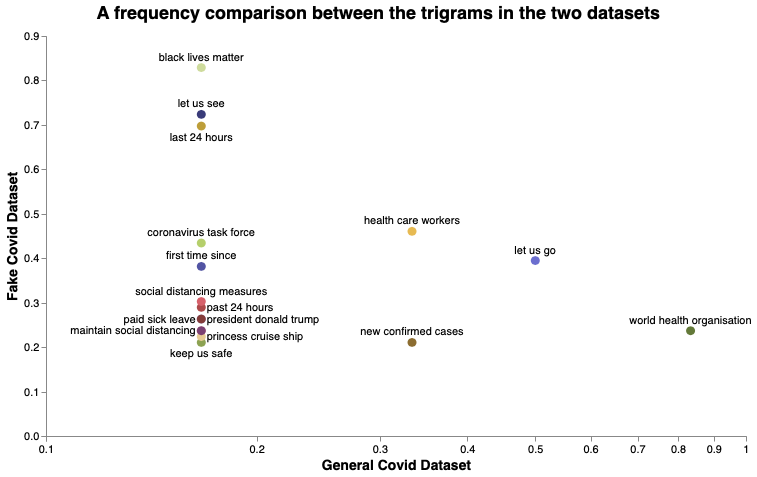

[Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe304zmmUUkBAhtGicfbzc2bVkkTCQIVwhKaRA7WVkwsjQBGTcaWXo0AHYABlKZeH8sNAAWcpkkBkw2CBoALzg0NKRZVNj4tABtUHEgrvQ2BkUAfQGUGWIkABsTCGHQABVlAKDuuAAPHFM20m0IePFZZwZzLNSAcVM4QOXtAGE2YgK0CpAAMSQAGtfJ9vn1UKVKKUAIwAZhhAmKAA4AJy1YpwgBsyNqACYYaUBABfKRbHaBBDdC5IK43O7iMgxNhsRQXNg4Y5sx7PV4fL4-SEyQEg-ng37Q+GIlHozE4-GEklkkDbfyU7pMW5ZZms9mcl4hKKKIHrGRPcQvFZiwV-EWggUQqGwhFItEY7G4glE0nktV7dA4AzYSxGBhWpgs+5m3lWsE24XA+3iyGSl0y93yr1K327KnoWk0ZDLELLL6+BhmCSZNQSFbLcw8i18uOOhOilsS53St1yz2Kn0qin+kBkNiYc5Ib6MkKjlamkDmy1vDtCgGJ62O1Pd2UehXe5Wq3PdPGlE-aHCrEKmTAvRtLje-NtJm1b107zP9g9DvMgQ6YAwIL4HhxPAijaEguhkDABY0pI0ZNrGDqPmu7ZISmXZvhmfb7jm6roMBPhgRBUEwZc2h-gBXTwfeK62uutGvumvZ7tmg5+j+xHQeINCweRBz-ogvjWMsfTUc2aF0ahyZOlKmHMVmA6HnhGBwJOlgQOIbBuNoMB0He4nSU+D7obJTG7gpX7sdSmnabp46caRtL6Yhhkoc+m4YWZH44WxR7oHZ4GQVxPFkUCNDLMsUYLjGy4SUZDGeT25mfrhw7LKpFzaDCxTnnAHLpc5sWuXaxlOniWJpklH6Kd+3TZbl+W+DetiWpg0wKIVpXxRJjFVdhrFKcO8BqecNm6HWVhNIkonRQhRXxm5pW9e+-U1VZ6AaVp40RZNDDTZNEBhssagdWJLkLSVCWmX1LFrX5IDIGFjLnDYri6c90H6nBs00XFi1XZVK23ZZ91iIB9Dap9xzhGwsQNmd82tv9PWJUDFmpT+iTKFMED1jpHK+ByOCdbR3XSctWHAxj3QwAT2hE9oj2nT9BkXfRKPXWjKW+cpcCkOIbV1pYsiKByIQAJIk39l0c4DlPozzw5sDA2huLTYv0zAUvFez5Oo-L3ODT+ywJOOAFIGE2pMIEYTa2zUkvvr8mG7V6Dm5bz3WxbThQHAEV20jMt65zBs+Ub3Q4GwQIIBI2iRaKEYiayVEs+dge647IfO2HrsPWE96R9HsdQOMAfIUHmdy9nA25xGTBMJYpZuCCljmBWddl6uFceVnyU5+tIBNy32ht+IdfnLp+qKJ3knuZ2vfeTXA9sAcCiM60mB4xIo4FQjXXI8HVd90v90xxcW+Mmw6XOAYcAzYurPpw7PdH4vd3KSXEV3xO4hjHcE9wBgGMGgM8yaV23KHE+ykLxIEsP+XodB1BWnkMQMcSDligIPuAuSx937DngdWdBMQ+ZoNrG8RwZB5wPzTuXDOL8IHVzwT+FBpCxjkO3lefmmDu7z1fqtEGykV56Cvk3EIYQLiKAYFAGs4gqExX3jwkyfCqaKx-HAcwvhRY7VDDQJY6UBbcLobwhhuCBHDkDGOBQN42TnBwAUF4jMnJ71Jlg+hOC35mMxnY+QYFkA+0iggJgci5oKKMUokxHjqboD8VYAJQTzhAnMEoJAXJgm-R1s-Yx7j+FRJUisegJcDBWBsHYbia8Kx0DSY-WhmTwnZJUeHdA1hbAFnKdxTAIQEBa2cdLMJMllEK0aSACpHTGYqxGVUmhXc+kU0YZ47oUAGDHXatoCsEAIK+FMN8UW4hAIC0mYjGpc86leRyao7oN4nAaPsCEYQbBbY9Iycc-pESzlDOuTYu5YRVkHNCbUl59TBm5zcPk1WdkYnyG4scdkhj-mzNMbktWdAIWmBUFY6IDcU7UMOdMuFTsEXnKadBGgYFCn-gKGQXwgY4BQB4li+RLjFEAtOQ03OZLlCyEpeeAwtLEgj2aAsVOOLZ5LXxZEwlaRRayCkaMj5IQkCjlhc8+F4qhkrAML0YWEhfDcSBGFelITGUzLFW83O0qIBAmKV-aR6gJ4qGOPfBlvS8UL1NQPWm0x5WjnOGof2jz7bKpNaygelFAkOJBZYJgSAoBAiVaK11wb7onhhFici6UbWxwQHQWAcaErlQGTCJh+x00yMZtmlW41wp31zbLV5iblJZswLAPQFt0rXD2jWw+dagUD3-AwWwYiWrRpgHs8c5KVidsdnCLmRJ80wlqEW9AAgcAIG8MQbliAaC3n9U-QNCae33UwOu6lWaHEVVKCuydbiWUHuUnOaIEiVDgQgBI2m6VflGpdQW-u914B-t8KvTSOBaZMBoEgOOYQ4ZTCvVkm9LsB6AY5CBsDEGriwKmKrFYT1sg7qOfG79UDhzrPOIEPA2h2iFijUwDwMGTk3VvUR0jIQKOBKQNR3wEBji0onbh3Fe6COLpACxqjHhbE0rA28LkjbaPMvo-B+6rIfHeELL4AIWkP3Ov492+Tyk1CAW0GptwIQIC00UJgGTKq3X3UM8Z0zY6VMWaDQxn8diDhbr4rAWkXK9MGvSQG-D2mf3KVHLDBqF5fC6FZJS8zvGRUA0C4RlzeVwvCMUNFsT1bYtgOvXJoLw5ItpdcBl64ATKmOf3Tp4cGiIpaXOAwMglKLjf0454R1hrNMBcBZVzG9XGs3muC15r-hZHlYE-M9AfMXhwN0ooa4HzRsJcExDWbI9VJEX1DchbXW8uY0nL4ZYgRDA0G0AYXQ9XPAaaeZ1uDO2LnTGHm0Mwvhk1wi2zdxL1Iwi+20C9nSftiZZdcbB3LH30C-fgMsHAPy3sg8E5NxQlg31sBLntccFo76Xf8-F7boOMBX2R1NNHrWZwJBhzO3H6PZAk5CJ5sN3JAdMss-W4cFAafQTpyWFksaGfGoq7d9AYRSAXH8HEIC8BCI-Kitiv5WmceCZa9xiKwsFDDe-sB7VZPIGCfkG0MgFprjq4tOBTkmu5m5Ih1Dgw0rvsQHMLYFowRTcEqGZIuwSztBAhsoafwmPd3Xdh+Nweou47B5M1pRzAg52AsEybG8E9asUEAk71VuddIm2xntP7xnCmZaFTL-35PBMuEUGUkI8RV4hFiKQZPVndMqxcJlbVvt0rWzoPDPPn7ZfvaL1Y+mFpm9wFb5gEMVxdSCX2TX5nP4B-xNMLIMfzgXhlMn857o97uUOm1GEAryAZEr+690TPHT1I0v3-zkAx-zg0sZuIKR70z+48SFAG-d-vnxGULoXQvu8PY+74H2AYQ4GBCvgCqt8o6D+S2gQ8g4EAQngo6J2-43+fGBeWugeoBcB14CBNifatgEBgeZm2Bkitgji7e0uneKBZuEqOBUOyAlg1gsi9i08POX6i2getBxSDBSmAEAojIeBuS9BbQXBiAPBTI7+NAn+SBcWtacu+BKSf2NWJ2KSXIfBEqEOpYihU8L0bAoG30ZBHWv+AeuSpGXIWhOh2gFo-EKhQyYg2h3yFh44zSg+0a3OHe+h0hf+uS9hxSgEUaMa546UCQvm1SyBBhhegedyQEOwWAMQ9gFgVhucMcFolg+gngVq6UlK8RA8KRQkIi5AEWt8jmUecGgmwk6R+RqRw0x0MAOemR902Rf2+S1R9g5RQRUyUheskeFU3agmlRBSzRegt8+Me0UuTqV2oRqBuS9RHqj2TI2RhRXRXWPROM2o9RkWsMtRd64g5gEMz06+IIcAdivBzBXehhEqexnghxTIo4xAMWrhYx7hpxQyk2AsMQPEiyL62oYwMiPGdxWODxYRuSEi28eMLgkUk2qsUwIkGxw4De44lKISfshw0JP48J94iJBwk0VwBQouyJ3Q8cHGngW+gQ3ETivxfu4xlBQy2qV+GeuMIYpACOuJG0Lw7Ae0eM8O6kWQu8ZJP+-xExEqHJ5wXJQkpYzQjAjIjJxxFBzuucMx18UAop9AFYAQlg0a1gFYtxeh9xXaMh-Bip4pKp4EUA6pLxkcFwkh2WwOAJZxxpUwppG8xmr0OxOGPJIRfJlJucZpoyYMb02o+JTJGAShXg5gvQ4GIZsQAZxwjUBmRWagVuAZzp5EDJnJjI3JWpfxOpHhZxGQ2oIs-aiR1weZCABZAZRZBZMQRB5Zk4Lp6Z5J7pMpA8ZZVY4ExATIxQxQtIbWfmdZmZjxuc1Z2g7ZnZ2gcIxQMIAZQ5dIo5MIegmpoxGZ2CWZQymQtIKS+csQ5QOk9iL04M70NZ85PZi5fZA8kUQuqW8OG+N40iAZc+XmLwzWXGW68q15UpFJDZh6RBUOiAXIrIuUjIDA4iN5LUosYE0MZAAFsiJBkZpg4F4iJBrx6yG2TBrp7RR51paqxY0QgudAEWV8JoAZh0RSn8xY3gBxyhr59ZKeJ528ym+mj2vs8xBaS2KmQpT22gksFFvZ6FucpYL6MREY5w+Qv86ipZbGD6QlSRJ2cAugJaFpQOdG3FvaqkwQo0QZ1weIqIierRwqlpCl-J1hYw+o6lml4wqsDyKFulsmilSaJl+mQlPqGqLhtZvJXF+lucXy+uG6p6pKNgVInFaFblA8J6W6PlxZzgSA-E26Fl8lVlgV90zSq6UakVYELQcMBFtMKw0E-MegxpfE8CimgBkp0VjOTmB+6AuguVFESABVYwCOEJxoAZhY44uMWkeMFAHs+57W2pAVHpIaqkSuccXOKxrIIKs2jm72+agmKRZgKsUWLwxcgQMauezlbprlvV90wG9gyAN+UAxmtIbAugKgh1nQyFK1qFOW1lDaZge1mkh1OAx1DipsgQnQ-egqZ1llTOq+G0+1d1D1REEiSAL1NK4GuhB5LlPV75d6ANQNJc5h4E9cY4BFB1N4mUYgugzVlwSN6NPqtIE4Pw-lF1cVykMIqI9AxCvsdOP2sIqIpZNKiAxeVNJNVgUAAZFu4EsgSwbFUACOqgbAAZvQnN323N5gvNjiL6AZwtotyAfFvQHIe+BNVpRNw40t8q8+qgtq6Uc5XVC5hN61d6atpamt0OCteletaURWmeFujmWIOOeIgmlt-27Ngt2l+eb5VFv6-auNi1EWJKFwAZ3tegvt44mtAZh1bIwdFtclJVfOuORtmee0LtDEKaWIKdqdad6dH1pQqIWYRRSU9tIQCdVgPNLQrNjtUZKWOhtIDFJtsVZtSW0ZldbF4WgRAZjd32zdfKh1Vwod0avg0tJoqyhWAs9YBFN4fsk0XKpYRxxVvOY2-BCq+2NFuwkGAZU9VxNsdI1gBgAZy9m9ycxCEAosbgEt+9OuR9i+cQfiYGtNh9tWLgl9BY4GNAz9rdqkmAV9T9z9xu0MXZwR51itdd3Qz9x2QZdIxQ9AWaBwAZ8IBmUBR0eMX2GqMxAZUQWkLI5QM5AFccrgAZWDcdUds9rBuS+D54zQM8lAyd6dVDqdmd06kCc6C6geqSZCUlW91wHFM9LBupEqBwkepQ-hCQ21sBYw8gkZJsEAQjBgIjHGagMaBDXDS5uch1ZwHgcAA9HD71MVn1ZVIAJpagz0wucjrF1dnDJxl1RGsjA99FIBx9Nd2j5+hFdgfFhIm5hj+FdjpV5+fa+RW6dIFoDJodygc+5hF50W8jZjStHEJeV81wKsZA4jo4tjpj0p7td6mFfE0EqOVsLNHjMdcOBwmTwunsz+GjYNq1ENqTw4Bgp52oMTegngkU04N5yZcMEGoopT2th5utkN5i9g44asouDJOkoDy1ZT-9ptPT0+Eg-e44TA3pr0GuuTc9EqczjpgE1J8QnV3Z4N3TlTxsXOJYNAooABFoiQjF2mMeRzQk70CgmyRwrIHSO93s2oMco6-aRpbDIxnTOzADkzCyNzfKqJfIvQWa3EAN8tyTbttew4Jz4Gwg-aDqg5WIAZ8LLU1wxQqaXIvsBiSzRDEqGLuUig2L44HyEg82uL3DQye06lo5NtfgEU6grNoD8qWxEaPyidbha1fz6AXh4IeUBm4w4TKT0LP4YUEUIQTAJsfh5daZYzmdeTgeo47DEJSyv9bR8ryzQy4sKrIkg11edjeIuOFEgkeMURoyxwtAEZFLijIa1Q5r5A2JjMFSOa1rx5v6cAYQ7QjM6iDiMCOLkLlFIr3QdTpgUwUEmGTa8AarOlWjnjuOficCtIOBNOpcrr5jP4lwybk0+mvhTlcrsbCrgJSA2kgQ40AjpB+b0dmrwKlGbascJ4pQyIxjHL3VuzQb+EcQzapb4GMCFb3z5TbbU++w4gdyGi1wgpoLzQLbOtnYudXMPRFsYEFwUilq9gdp0brtgbQ7zJigZ5FiV53xkm0wZpzMmjVbeLaqSFVdmi-VeMu+1ioz-b4ztd3LgZJKg1UchzII5zixbBiY8qyAFGz0CAwxOTAbXLeza+gHLzoHMQDAojabkT3QIHbQz+0q0BIsRMj72zA7vzkH6A6HvgmHRl3gMABRiHgDBHosJH9AgxFiwgNKjzFHr7tHqR9HjHJYpskZosDH0inHmU5L4HFT7beSVROe3g-7EG2AsrT7GrF7uc8QIIhz0nTUDmzH+Hg8dAm8qn+mTMQrUL27F+LFenfgWzf9cnlLCRknoGTImQn+95T2O9SDwsPE4FRTTIT+VYkZ9gPE3gWkTg0EfqQng7X1F+-nwzO08gugc+2H5nBb1bvaUQIT2k-MbUBg+nW7oXFoKX147UnCV8zQjL6nIn2X4EywUaWxI8CAJcq9NFTj44ZYs2JgAZJ4Z4EATA1wRoIkGXEHIn7XnXrI3XDl28ViKDg3VOw3jIvefio9OyfWjiPs7OdiEgJmKgAZpXag2ntiK3rITLX0LzsCVNRQxXhn7BJ4ZNeItQx3wXeHIn53Ksl3ZNNIfbOHz79juOj3Ksz33gFYsX6r8X8n7qlibw2+0QZ2QXZ7hDlnA8oPegSy5CsAd8Sy07XTt3hnEjE0iZNnCZe5pnHu8HrQAZyA0BmesLuDbOgBQpeuEt704GuuTgm1ZzJ3oX9P540EfKizN3EzGnjPhMRuwB1tttgmGzUBIBsB4+Wtr3FnNrH5vQYvYBmBiyZmPE-N4v8BSvagV4DLPXwnhn4wygsNYdmUkckUtKp7lbUPMvykRv44JvNAZvZeMTBFj5Vo4FveQZ9g17P7xRgeZRaGdVgEtgukho6Xm8XzUvAP0Pp835wfqsofjTTItImkFYvsp1FvCjbrykbg8f2oSfdpqfEbLrXPL7GnefKf4anbKssQDVzPOjIKkbMRxofn3EUEkvcX57Uf0CoskriA2D44Hatf5+tMpzZs0aPEq6UMJw-tY-EjwzX0IQBgFAs276OvIXOjnu4XkU9gWUWIebsnkfVvMJki8QA1pG38QIcQW60-iLF-J02gdyQCjg3vcmgmt-7mD-siscJsRmAFbf-3Hfh-H8B-0cAh4f+dAH1Fhw3bkEDOoXb-odHAF6hEWxQPEGR1X5o9QuyaVNIiQzROA1Se0S-itxvIlpbUeA9ZDIgX6IBvY-NY0vgPIFSVkA3yTENFyLDm99+AAzPsOHEQMB7OgQHvidnt4qwwoUAzlrr1C4G9BBBQUILIhvC9AAy+xMjNFn0YedJ4DqUsuIWi5SNZmbAewJkAMawAWQxYVutoNmzaguABgsRNINUjCDW26AnRskhI6jVV0BEUCCgy2qqw36oEbwBvXD7t9LeHAn8M4IcTwIOq2bAHMX3e5TVWQFiQ6uOF6JNEikkGVHEVUh4Z902NMfqn0QSFXAkhlgAwGaUSAvo-uMbdgWkP8ie0nAZrSaHYhP7j8nOb9KSpHDMwGhhENWISmZ3-5+DShIAPIQ82aGRZWh2oY4DeADIsgLw4UODhh2o6qDB+uOOzhoMwIWIe+KlG3tx20LpRlhQdbQMQDQHc8RONvLYWXhmzWCZ2uwwztsNI4koBuigKEjMKWxHD6qurPRkEx2FOg6G1cBhoJi67XAnhT5FtCYxSERNKOIAGkEwB3J5Qjczxdbnax8z39lYAXWGGQBm63DFWLIWQDHBLyDDRYY4BfrSD34R8ShSHAMFiNGTElLUyjFHj81OFiDcRgdM4GMFDq6IdUPbPmsiM8LMiJwkZB9EASkbHDUeVIuwdyOCaRQ-arIqgjyIgyZRFUoooZMKLhLRBwKSSF9C8IiGB4GAQIbwbjVZzeFSkL3XwakMJEYANSDiUDJCnqogheRlIkviJx2CkBYgC3WICbHML5wienZFYCDXzh1YgQgwaUbnG4hG5DoXo8DKiAEAEU1R8QbQMGIW7wJlRcbQTJGL8TRi+8FI3DvyPPwJjAgIQakuSJvJ9M4mjIkIMBnCitAkMuojofqKBG0A92aeYscBksCC5rwMYwthKnr7Np1ksgIBEAWIAWY8QGLAZIwyLbtixga6bQKUDKCOY3hx8D4YHiPQjiyg54PyuENKATjF4U43JAcBMAjwvMhfKNpGTCCJJzgWaBPmZXkAj0fRMPWwA8xeiRROupsZMW91jGB4xA14zDE1hfHDCzx90EFK+K-Fx57BYjU2Pb3PApIHE4MH4gCOFaGcBAtQeoJuWpY34ieYQWIYu3P4t8agH4j+KyCbCrJI4AXNbD4LLGAiWO9vEELb0gEGZQabAzoQaLOxOB58sMa+PYjerp9CJGnOibIAYnyBwM6NRqpxNnLmF9Wi4psdYQtjXBxAKjSEhaJTFWjDOYkoCBJOGbvjBJCXUGE6RUydISU0ad9HP2hgui7kS7RoUoKTLXgxu1wgbCyTXgRh7k09cCTAJ0acSBs6UA4g0ViCI9cGmhCMLIFVKuT0JMJVSIV3B6xJfG44YjtMKUmA97o+JRfNgCCF7lWa1QVZBaFsClg7c14O5D3z4qBAUaYgUevB0sAwg8QZaBlhIGgYFTDxkUWOHEJqI+SfwZU21JVP6JpTGxyk3TLeLFrWJOcsg6qch1vE2JSwvQIUi+lLHFCqJQIgAiJCkZtMhIygUFnOHJ7fxMgnGajg8yQRx4Cs-w5iRBNC791v4IWSCiXCTxdSeWY4XHmxmlRgRAgI6UkjZMy46NTp0wRQpdIqEq49cRQzdr10M5I8S4paW3E1lXRch0gYYCifiJGmvsmYFw6cNpNMAWYYQMIfqHO37ESp6iFia3MFMmylgV0xkw6ZKlhgypiEpAdGfASNAmhaYYQ66e9NC4oI-YHIQmayGJkcgfuCgNKljKJlh4ocbURmYdzxDIhruZM0QTo3ZkQBWmXMsmsIFpBhhkhG02yeflK7IzcZNIMzI1SxJAFYYh3a2NoNkAlwRRYUzvvljnB+xLABkwIJYDuTTA2EIUTkQQUO4myS8KwEKA9KWQospgNs2UfbLeAX9xAIKDBFjIunu53Zns0iooFBbtDhp5Y19n7KtDWIg5WwzsneOl7+CLkLwKOZzWgK75PeC43mWv3PzJy+6cQNOeBAFiAFD2O9VEYNRWxP5auZc6-DgAYD6g-+IcliSJwVKWxdq4EUWBWGuC390ow-YOW9L5nn4127cj3HEC7k0V4EsiDQXIOHmAJR5xJCABoKAknQJ8WM+6VAFkC1BikGpJqeFI-hryN5+yUjriK3k6yfwSwY0h6OpSpc2M18KYJgGtiqQ8ReohuYZ3yDkIaUUXciC1jT6UTQ5GnJ-O-IUAmEWgNw7WYAIjiiwDglgNTDXPYo3lP5BY9LsZlPxYzqUfFJ-FYHZ6vToBN0rxvxHv4pJca8+GaRCwzm2Dz8os0pMyCIW2pWupQEYf6PsTXAtKNGb2f1Q4Kp8x4sMRuF5jDAZEsZ9BdhR5K4X-kF6pHSRC1zpCBddAfnO-JgpEGZzccki6RYjxKzh4sZLQGRSou0jpR8ZEMI+aAvQBNxsGOi2PpPxGzMywgfopkAmxpJPl8g9AYCCCDZD2JWZcAPEC6Mq5YxbFdAGAA4oNDOKSZriq-LHIP7xyjposbZJnj2I2QgZj8zaXX0QkOJUEjaK2PVlZqvQKye47UPXyiokLUxsw5QOIGwwRsHEkUFTuT3gYGyEg3uHYqHRERaRtQJ1aIDK2CUEigRkrNgEyC9ISdPJnIzKPEE8lSChcagCgCjQDIfIOCh0e3Laka4tAo4J9WRAi1LQzKucEyxZUVxAWhKegZmVUirEWFXyhpvc+RYJiQC7Lu++y9wf61yXSStptISwNn1Hl7k9Fmy1jlSgNArcwUICZBSUuLZ-ZHOWM7-r8u+xZpH0YEyWdgtmFWJRYDIJkIwBiRmsnlXQw6EEkuDV8DcARPlBYj5aj0RFCVBsZNKJ7HSXgZ2JajYkOBcZDJty50utwvI0qAmHjTogMjhxDNaVOSsFXrGXFwyuiCMp4syqGamLmmDiUxTAuZmHc9kXgt+kTy8ACQ4gEJPZAyPRpxNb4TgQ6n7Ekn3ihJucfKZuTMz0weBCKg0U4xmIGYH0ngF0aKEOiAKIIugUsrDBFgUpfAHlMvKYFOaJAWlIMjTo6tIrCVChRHA4n03AJYzQC9vJZGl18DfBwMNc8ihsq6HhrsJJhRZHThNjd1l5mhBNcXiTXXBNQj2BQPqtGn9p01w5LNfnD4rWy2EJkuqgqIlhGDcBtc8AeGqRrrMjcvKKTkuFPHRqDRza0pa2tVJbFOeVylUcQxwqvA8Yty6kuqWAX9qHxiKeSTHDOD+ksZ40UUNlzLwSzv5T8m5ZV2aXbjZFNgvJYJmsXWAr44MyhCfSPXOkQgpi-CfXLiXn5JWzhWxCSkJjNAvS8yy5OOHkEFj4eV6w5aQtxwfrSGDLZ6AP3bVAjq5gGpkJnlzZjLVIKsU+bSiNxhB4Wzw-mssDPgNd+eygIqTEoIk3qjW-EQIKItSKgYsNEtSKFPD2p-TQ+nykDa+1LBRxW567B4WqrjldDRqTqxQCBXH55UAItQtRS8E42z9jWwK1dFUuRxgZ+sN5fDZuln6ibuM-WRxCbEyCsDgZP8kTpeoMZfYIscQAipppbS29qO4uHuvpqQxFZ-prgTKTupOHXKdGFiYDKZpeBDCLN1wHiCbHTlsq+5j+FoDR1UgnMmQQg3Na+0fTkbhml8ZoHHGQAsiaNGnfaVDnUISNukUWkTlUrK4RpOcn7UslMPP6HQYgCAB+Thqll-rstaIy1I1zGAHTEthnY4EPO2XDNqNk6jVVkSCDhR1ItMbSG0C-kqb11dg1rUKSXZebQp9W5qVUwAUrcaAxGxBBZJpRAhY4sQaye5qOWB4XAMaGbVuKJmiVnoRM71oUIC0adxojIElEeOghHbwMpgUdky2O3kQR2bARuB0GMBT81FqjUZEmqsUVgmJa63DTHi3EgchxwISLYNu3nK1Xt4EabXVjkb80Qdh0IxqWC9kVbQukcDwOHW35L8GAHBXYG1FjzKbYlBWwTMjtR2ZSlkouEnGIr4Xbx8dGOonSjouDmBhRMAeWU80kQ+pqdPEWne-nQWAEqMDAUekzpMzyy2dYwDnQK2J2w6dG5gDFKLBiIIBf4is+fKczAxPTaA+mBJTbKLksKFdvgJXV8SISAQVyrNcofwNb4zg25eAZ-vO0Dy6QMgXgJFaVjYTnAqpwuhxswGt1WhoA-ReIDal2rQNUQWIAqRaG37rInxmoNLMXNCzSpwMZGt7Z1o+2B5Q9EGOwFJWY0hKuh4e+PZNEUBDD-a38QpEMO-prYveWM-zd6wFhWg4hcg7iNFyLosUDi9iLNGB3+3HzkOd8FDHYo9T9N7Alik+qq1blu9MSzeb9VgvJm3S0sG4kuE9iPFNAS6fC69mPuaDRA+p2G69djrQIz7BqBCwfHXJ-V7rFWRWELNcEanuLchY4VUqNSpwZayJmAXBaLGHwJlcFXwyhYXPWV179FI4eRNXMlaAT4Afy+3bjlf2m9AVYatUsWv9p2s8omeSDMNgIE+wJA7CvvXIt-UlFeK80lkL4k8BKCAycGj0esmi7D4N81qrGZgdcAGzRYUiqoJkFWHEGPWmQEPGyGKlYySDx2dPCAOAwJ7WltGm5LHCYOvEOtWO8FYJnQNNqJAh1SFO3R46Md5lgh0wMIbYC8czYk2WacgpEPSIpKpAOcNHLPkWgM9yhkinwd8DwA2glwOIljO0NZ46AVdSBUbp20idDM2oAQJuXGhNYuD+Wng4+NegDMHCUBpfLUwkIZQaDX+wTNxBtzDZtQDJMgVWh0164gjBoS-tfF7asr3ti+4hmjONXjh4Qxc5I3CBz2e8nsFhwzjAw97ElfYhofmleyyOqwTsoGOrfNrgOB4S25RkPFrMf2bLFAtR8RiSzWz81f4ysjIBAKMoJlbV3RxFiZh85za4jThwEv1uazQQClTITUOKzsjpUhj0x+Hqt1Inmkxune9LMW1r2VHN9uSDY24Gfw2EmwAZQwPALjw6ISOi7bmhBHX396PN8ud-IZPnRk1ou1scWQctuMLbckhgRQASDxAFSmA7ZbSATAs3ZHQuapA4vZAignKCxSa0E7dKhO06BGkFWgi4B3qMifkYIqlcvLWa+lPYrgaxK4JeL+MSlG8alUM14pjpJE9R7Y9ZvPwLT3i-Hfpp4Hca+HfepsdwWoyvB2IxACHVk-wWUCyMrQWiXwFGnoDTFMdjhgfeflqBNs5UMBP7TSYHUSo5TCqaIKlVgTdjex3ablWajAjjxrGCE47NYGXZ0UWQ8+jfbSdxxRpjohYfetrvt5WhDgTWpsHCbTGN7P4fEZ080IOqHV1pIxvWPDOdhF58ktpopIEH5ghA9tBFOINMDhgwn0Mn+AVuVoaNdC309YVBrE1gRrwogcq2g1mcNCvQnAlKN1apsM6JCJEhByxNIm-iTHSA7x2AzsYlT7tGONZ+wHWfcHiIbw5lFMwaMrFUorJ2nPiqUu06cjEJK-KTltxpACzg91wc9ZDPNMfGJQioQM7uBKK08caq0klMEGRZ4H4gm5wORAFTTEbyp4gXiq6dxxBAaKmu95UaGpP+m7jgea85BVvPjh4cr9DEWGoK4CxPAfWyAUZrh5+ER0odFdjpFXQSraDYFmVcsZzHNUAoVSt9CWa61eNlKWUdI1FzfrnnBMMDdC3EDETrJo0tNaLrhdCD4Xn8FULEOOSxk8QkA0abQORZnJtpT9JHAkOeAHMxiVz1UQPCxcjiITbkrQBLT2dA1sXYRJmbBtqmwAVH7znxiVHclEvpRxLagbBswfdUid5LFoCS0pZIs0WtjUlqo-wWiBQApF7QZEAuYbOWn91wIbUPQV-LVdYCo4BwwvtGOIy7WHJy1KGmLxMXEWBvNy60HFreziJJ2Xy8ZhwliA2Qk8f2kFe26f8wrT6JgDpcj3xGJUnGHbjFahxxWkxq9cwAbwsGPYww8ms-ulQuI05SwiZaCKBkFgw7BLr7BUsdMhhsY6AR0CDPYFq6fsN0wYYpFfADIUYxhRuDRPZFp0DWTlQ147SNeGsR7uDUp3HH1fAgDXBjo1+a2NZejDGErTltVLNYWsbWhrS1jztvDkEFBjM8QRHK9GxVHWc28Viaw+cmIVgW0h4ryWoG+BX6F1TWkdTages3bv2ga1623kmls8xwHS0jAJcVNTqJUfLLkdfBmOGD-l7J9wNEDlTkNKG1DKhpnWzrLmFiZkEomwHaDqR9BR6rEW5t0uNmhksBGVTJSDJ6mrBlmvkeZcDyk33JFN64PoCyCIWo9uSe+vIAZtTGqUnqZm4laeJHAWz1weEAICkrxBwo0DOEMLaDCtpuU9vHm6taUalgOUJ2qc6pisk9zFzhN3OFI0sXNCk2NAO7Y4mNA4MF1dHGAEkgdNvAFSVS3o5Vz9j9o7bl2gSNSgtCepwrWMu24BFWCO28hUjOAK7afS7BLlQNhrfdGvA+3ng-tqHIHfHA0LozaXVpi8ckT2BLAfa4O0Np-CJ23jSYqmieFSMQZG0D5Xuphd96FgcKA2OwAUY9yQY21VV3+RXbXhPR2JuQh1vYcapaQ6e67SM8zvrO7rqbuSDSqtm35O8sZ4yupjmaulp2AdP4MezYFxpW3Cwxd6dTEnnsqV50pGi2KvfXmCda7InedIPbAjD3FxHFvsIJlHu6sIwPdqzdCBtoTVhe5967RoUpuWilTQyZABxrAxco7e32ZvTfPW6mwbtKnAYr4xP1qLrtY4MMj5wvXmBW8yl0s6F3gSf5AJkUA3SvpAd8mqCHqVvjpGgccpOEUM2gzg-2tGSnAmkUy73Zfu5xni5hdg6sHVtmWKHA8ewV4IQSHtQgnExexKjo2WpIpi-EKLEZWuTW-DcADwJlFLVCmPWyAWgPrkdmmzxHhYBVOuXxicYTDkN9By7gkcKPPKtMZRyf0OaFLS6-UyocWw1NqKyOqRFU1KJQoUNEbiNj6rDJYjwysQp9tbF6miB6oHLFphh4enplnh25LwbPkOo4dDJSuouyDbcF-sj2cY9IG+SvrMVqPa42tue69DoImwp4qwhXPdb7rumQgpAJjvE4Hj2mW5uTgsZMeQC8o8nO9wzpCk17ek2o1TjgvMM-2VP4Hicu9tk5uBfx9GQTz0jQAOBvAzsoaiVs0BaBkOr7wNoZK5jeCB9i88qDVKJUl2qxMAxB0Bii1DaDVm46iPvqgf+VaRh4mtQycBuac6N9n2oTPK6oz2OmY4pacRPYlXpiV7poLPh0uzI6SWBHl1iVI8-sMTxlArxMjelR+eZAyN0c4sHLcEfR7woT6PRBiqiNoG9ZC88YQYDu1NZYHSFinFAFi0U3fEzrFQKCoJt93OHmLp1v4ZxeW2ohrIOILtyxnfb7eJL4pGnvJctBnnygE+vS8ym-kTMPzi-qoAnt4uvHykDl8di5dkQiwRzSedy6cAivLUrHOIJYvvrbP8n8VCQPAmkS6gzRBoE2BGHag2J70JkxxbjHucGBtX6TD3oxaxlaUPcRVougkFilYzSu7IAPrDFBfvPrCjLywDHGgJkqTY3Zye-XvQDXFYhGQ+IerukENXRltBwN+J07OhuG71dy+1Tb5ecCQ3bUFGlXauB4xFOTr6S0Mkbvpv1w-eHNcnYTJ5u6aL6ZO0aXIEm6DYQjgo+sjqrRo6Bi-HQTAfIfjP+yBc2lHYFLSNvZsIQMrZm70sSpu3E3Pt9yj2z4OFXykEd4GDHdOAgQntDxxrfxcTPwzngWd-O5C3lCl+gN3l624Hhzu37G7vxFu8UKiyLgXEXSey4zdvolMpSP2M7yrmlPwMqdndyHegSPvs7CuOhRxi4xs8tq41yU869lI-vNqgc8DAISvj40J3w4ZEPw0vOex-A-NRItMf8CEb+3mtgeDZ1Q-etaQ3T3tGY6yc4ejFloXhVB5cwG9Pi5AMcH4FaCFhqVo4WZuwDaBgXOMBFT+EBEYKsWbj9D3d5+I4+Rx7IxpHNSMNmz3lZzSXOwL7Wl1y66ePylNLDOjPaQ5PTbWqT4aOfn4wDq5TpEq5gB4wuI7EtD0u4U5kSU0-DFT6M-jc8fiaWIUz+FBPNSVOppH7oECAqo+pbP9MHSbubc8EwnAuubd286zda3iLt+FWKGFxf+eB3QyDN1YCnZ-DKBFqCWjF-GgU0EglqdXC0Fw-3RJEoI2IBkCSQ-diycb5+5Z5hKxEqZQ44aIWSplacDPCbn8BV+ISlhqv68JIrTUa-RTmvmzgIm716NQ4FSzAHER9cc-oBkQTAJwFGgI1LbjrWM8b+Bkm-6YVh03mlOkv2F9emAAZGD6UFXS05lukFLr81z4VLd1AJYVSN3skTmeivr782gqg3FnfSGFTn10-tu-VzvS1c+nEN7SDNBgrnqPzqTIe+bKp6Mu2JP1-CpEsyv-7xy2C71LA-xvzeWsD94G1-euh5KFLFbnxhceW3l3n8Kj9pjjh2yxQDL8pBx+Dl2yjJiciT7qNo47WDI8OkZJSqJhGu63B5irH14OnVY0DfhoiAPniAoGWMzn-QFpAYkVgiNab-1LZYLTyUfHVwS50fR8cMrfC1J4i2S0IBcD73-YZMsAhgQ302JQr1JNq94krmfgSFBQLYYZ6kXtvdFZsiu06-1V6d7oPCy6MUATYECyM+u34cXWAvA8R3xFTy+RY-HmvxOTy-C-oe6irv-36B6cD2+UXLNs4sI8wz7zA+EpiH4B4Hggp4-gkTpHLwbW4mri0QfleG4UJsYGAosnVlH95tmo3ie0GnEq8wJv2SJzbsZ5j5pgxNTB1gTeIWucKNVJHIBKelSnCWJ-PHxXn8Bp8DooOoNHjDlQ465VTU7WEre9SFkSCagB0rdOfyyAX8IsZw4spNq1mD1r+B0BmTf9+cz0aoJNaimi28FQTLAR90QF4DXOIVA3j7CoXg1fCv-kRXcpab4Dakdx8agg1DpocDpDLo+Dfrb7lUdSm0Kxe-dBugaC+ypyKm8ORMWQ8QbQNqgpUfsKo5qeuOAlQIB6gEEIoBVftMCABFno34bQe0OSrfw0tJHKQYi+O9Cl+8tgU49SoLJmqAIFAbEDAY6hot5UBMRCwFCQ9gIDLg+A-oQFyAKSEAhcBSdkOKO+HQGBgE+MLNwGrkArJFAUYCQM+j+6j2BAZ7c0MH6TOExmKjjew9VqUrW+LGtRLJwquDYj1imUKWDEUegYnoGiGqMsC36MlJTreG53rr6D+NMOAJ2AbgOjhSCK5PSLu23Jo656AXtokAJAqnoj4dq1fheKBAdbjqqdmdYBAaSBGduia0oJ0M+Siwflu96JBvwtGgpBLvtMDUCWQcIgrySrvnBLy73vRrjQq6PYQ905QX+BMa1KjfrjcmGAu7ceD-gSBrmwhIRApIdBNwCEqpGG64mOaQV0HtBOAL0EtaBSnlpJ+HvhtRaQzQi1gvE8gCXA6497rMHA0OuMQh+IugnQ4Y+wAXIDLBa8PIBrBuZOoIOc+ARd5bBewZ2QHBPAgsLJYMnEH6GejDlvTagcIPwyzgqASEGgaAELT4n4QQY4E2+U9tSB7mORCnxFiviJbCt2B3pTwIAYEKn4bBQAX8HRIUIVuJ3AlbkGbVGiIcdjgwCZN+TXwAkFYjwA55MNgJkt8Ge64UBgMNhloYLASYLqhgXrjkhTzozCNBmwXCF5wFISBIIhy1u74RewKGiH+Ed8JSjUBkPsqbHY4WJyjNYkag8yKy+gE9QyoKyJTIEymBEt6aQNerTT4y1MvKHWWNenjJUyGMkHYvuWwb0CZqdYCYb0wTQhQCEhc+Lnycg18Ktw9GgapaEcYKgt-DRcCOulT2ojocI4gS0aHEHdAhgOvLJoqIAfTVCNXs4Fg41NAGE4U54OdYAeEwcpA64gYRGGG2JEpGTP4tftvpH0PMm8Gvsb6JYBzugQLjTrISSMiHJQr-NMA0WPnrAghAF-KBgMhYzs0GFoj4uWFDyVYWVwmwfnhyHoQtYZ8KV8E4IOJgeXEBaCVW9-mjYv89YT2HoKSfOPSxAzWtfyhqZXBqgDKpik-ZOB-AVF4w2rxGDoLqzQCsjAExCGF5thdwaHbqhFtnjB28gpgNSxhrUEGH8Bt+OSiYEUXDS5uGWJBW5Yyd4YkEcEhCO8qOE++mFjXw8+MwAn+73rGrk6tvFuh+mtwXr7oA7QMwC0WvbCEC52WMpBHlsIQPJ7wRKOjEY2IKaKHTuhIIdeFrwtQK9goRiEVlAhiJOp3oXkefkfZDhpuvwTrmetn2iZQi-ATqMu7RptxUmMhuBSx4v5PQQoyXoW7DkAjEZxFVgMqL27CO8ytxHJcihPtYIS3NMWLY04JgLArIfTPbw3Be4eBEgAckTOGKRCpCAS4EgasrxaR4EMQQGAU7G96TqE-jnRT+geAqE2AcCN+TkumGsrjWI7ACCa6QUEG75RhnIUpThBPnHjDyAjkQy4KALkZ4JpSK-C6ojCDeN9aIMGUGrhm2qHLuHuRwfspCRRgRAbgxRFtuW66IbeJ36Yq80lujv4N7DW5Heagq4D9EPKDmpHexqusRfKigDvjagq4TRIiwFsFjAJkSXPVE2wWMPHhGYBFM8Rj0VyC44h4lIe97yC+MJcSOIJ6lS4Qu7+OpBOyldnWB5EPEcCLTRa8LNGNYUgjeAMs8JKBEqRwYbox2kjkd+brREhmLx4qtnnwBK4qvMdFfwjvnewSAdAMnD8hyfvdAnRV0W643RjLs1iUCYwPNGJEt0aj6JAfiAoERg9Hl1H-RErB0pUePprLbzRgMeDGIOldl9irA6wSMKwxa8PDHwcQRtfST6oFPYDmiITPYANw3nEbaiSa2A3DkQxgK6H3R0YYm7WIvsKoC-WTanWDzRrqg5QWwWDpFDGAlLu94SMVaDjQMgNwLbgtWlqGph8UPwfoEVieQT56FIFgSwYackUh4A7QKJpeF6hcePR7nAjkr966hTISrG4wFxP0aLhvwb64gA-Qk3DNCHlMbTve+UjOQro54HeZgR20VbF4AY6FhiYRPiK7yla8BC4BUB3HJ4BuY7nG+GII7ynRHHBS4VsFcR-sZBSBx3rK85bR-AeNCoIApr4DsxceHkb1+BASHFcQfIdqK3K5hKmzvekIeIzgYygJoR3IjikAZFxUcEEIqyUsSpaGcwYgVJWxZAG1Cth8UfuHQIq6A3EMAs1E3HjBHkdZiNxmsAZiYAbvKkFoBkQu8T8CMlGvCjgKcScFMhqPvjK5ORdP5xoGfsAvHSR7gffwS0R9BH4ZG1YanGzxCCNECyAwgFXb42tsfwFHxJ8Xai9qypHtaroq3NfG7E8Xgd5eYMcPnIQACOrCJVxcDjozK+ErA6y4CFqN64axBsS4BSOz6E9DaAZvoVFUuWcYBAUAO4a8HAJT+nAngYnEiRT08esaLFhypXLCx8QfDhTE9xykBvzaQVDmTzu22VLgmU480d6gwgFwHiB0gbcsmrmxdCQwmMaO+hFaDyO+mUY3gh9iPFMMRKoxxCkgsF25U+gavz67s4GLaLgY7sgQkJRw4FIlDydIL767xM8QbEyJ+QURC34SwGMF8BWwcon5yDANoly+73mLJGJ1JOmK8Bi7qpHmJSbARptAPPpzG9AHYsOKYgpQEzzveM4q4l8oyIE8ECqdVNNpuiYKITz562go6JqwrQFJTQAJgGg58JuSG55DRXpNPHBxTIXqCIKDBHwL0EwRioH-KEWiyBlcBblcApBO8XnrveRZJGYNMAxKao7OZwPIBcYeIe66Kxs8aGzuB38KLB+EsFGIQ2x0cVsFtJgsb-yQOwUplqyJLcSV6FKHzLtH+E80WqQTJF4IgqNJBsbMlBKhGg56xJEqO8QO4EJNlQaufsPNFRAWyWxg7JTGvkC8mqyTKIHJJFF8LHJdzCgq7J43Fcl8QNyXaicgSSfrFP6ZKggpPJI0YFEuhzyR9DxSxgLbKPW73oFGQJR0N9Z7J47qcm5wAKboGbJXgNsmIJZ8VsEQpTgAilXggSKLCMEmCZYFAisQBAHjQreAcb9JPfJiH8Q3MbLKy+EgI0zzJT+hSmjIVKR6KKYbkd3FyJHEPMGboRTiU5-uaBlymgeDQuKEsKQsB1bkIcxiTpHqyxvOYvJWCTzxUybQHVgNYViBeo4wNKZsqHQCqeaRDEfKKgiKSUKYw7BMhYMcDDo8BJpHvoLXLCDC2OuMNgps4Gj3SrcscOWb-gLWnpBUW2QhWZ2oZsBWDs++UvvaZiE6hmEacLynjxj06YUgmbKmHsGkqw6UNxIi+1wOlx2IbLnVTb4jHA-r+pjcqyBw+n8OISYSKGCMjYp0sY3K2yBWCSQJSZdhub9+VidtG4JYhImYVe1KVDH1CBQJFCgYOkP2hOyPEk2nHYsKk7LngF4CgzGEpgsSigYAAaxZgazVngaDpNAMOmRwo6WBA64WMEHGvJqqVlZy6UlGroVkf5qrosUIUpnqGh7Ic3GqRFqieyxM5QiYbKASTu-bz4JkammGcIKbBCoqeMuJoppoaV0LlWzaNFx+wfpFcxex3lE1A2ArIOfRrYqSL0boiAGfYCpI9MAgAwhe8QbHEos6dSR5C4FsCmLszIEbijUIsTimvsscayDhhY4NYgGY4hCMLRSYELQDLOJKLNzcKGOtcArAaGlXZfwwyapGA0V5M+QVWbVPiZSpGGaXzSIFSjGQSWH0IG4hU2KsrzPQz+Ohn5phnCJmF66yF3G6JTIRK4nAJyq54Q816WIIAKGkq64kWh0BZLw88+GNHveCAWsAdOScJQgpa5Ya3TaZHSvKg2BDYb2woaqWuWznAVOJzrIKJsOpCOZ0ilBAEUbmeorhs9AGGzSZFacuF+ZpHEFkAKOPCFmcYzbLApQ41jKlga+OmmxQ74j1O0BXktSoHJJZV5IoELp0qUlrJZ1+FUpuGw6PzQvoBWc2iMAVOMEHPpBovb5co3QVeAJAU4VjK1Z5EPVnskCuBJg12ymcc5rYDPDR6ZOY4VNzzRnbkFIJSPiHenagcaYxzg8uDFcAGgKKuNkAKk2e7gtAx+vNGRQ5ehKkLh9GdtFUOkUkCDTpq9Ab57Z9MjeFbZ-Aa+kqwIzi5ZhQMaCgwoBJBC4CqxFxDfT-gD9vz6aQkZibCUIbtiUGnMEnEUqt4DeBc4DUUaDeJfxqLj0RrYEGOtnXgh0fNF8w4wvWCDCj7plZI5f7s4B+ZWWRxkicIHttSauWDnsHI4mUkYL1Y0RATlXGpEqUo0ugft0lMhZOZlKsWlOdxiopBzDAGIITOR+wD086u95cOX7PtjQqsLmoZrwLjC2iDeuqfdDC5i6jqjCO80ZLnJcsEaeC0KtrtLk52-DEl6Y5YmRgIK5fwuODaGjMfABOS7cBvRfi4yConJJBsYbnewxuYPRX4ywCr5i5hPp2TE8IprNGwWbAOWnce-ARYjwcccIYAtoomdXFw6BSt9h9uJWGxl7pLKSMk-gIeVs7agljvblEY3NMpQFi2MffzgiZAKgwExlqAxzbwqDIvhdJ+6dtHZ5jILnmwkGhFGrx5P4NbBkAKZDxArpGUOrkB5dgqCF157JusJTYOYqYGCQdVKKZeYpOHwqLUOMelz2I+8vmFFuVoBf4v+9BPoxrA97tpDWuWwhjHveFoN4oOIG4lGjTQuDM7n7QCdMv7b5fKBkBOZ3OeIS+q0XFiTPQdgJoJxREeapHoWZ+Z0rNEReuwgMkHrHrhApFeRHAP5J-C9DP5w2NgZKsSND-mv5kCqFjpS1CSAXjmJ4q3QQF49DZw4hNPOFAiwXgJWhk0hTlfkyZBscgUqwqBf063whCqoHPA1wCBw2mKWD5iDZLRoBKEUlKHVR3akKZ1kOMX0g+xUZEpMLDwc7uYyEYFycJrKGSpNv3ztIodLHglpzVCsBsFsIQbE0KPIYET8pCsuCFDidKbahPB5QDYblAO9MM4xSQWeEliw5GVNzup85gmRqS8hG8CQiWMqe6gsEWJQLXwWIddpVJqvuYWbISUlYUOqgjM6LIKF4DxlmULwKdlbB6WPkAeFjiEpwoMIVIQWScxAKWDU8MCUpxbCoRcqqepi3sbxFir5r4EnJdBbjhK6ViNqDXgZHLulMgZKr1lPpSKUyHZQm5EJTz4RmFfhcIC6kzY2I0kSWql2-ud-EOMJMiNESIKBnHxWICfPzQdIqEUQYWuo+GkpVaPpImTE2DefUWP4TpLjxDF85ozE1yxoq1QRc6NGpwURTFItqzFkijCJh4STO-noANcrHDhJfKBV4oM2jjoZWCQifNFs0OqmFCnxNOQbHnFhYCPDKw1OQXn8BFxXcVcQqsR0oPF1+dtE9ipQJaiyAUOA2w6JAWacH-F5QJaioxSRZVlAiAJVIJ9e0BO+mKysJWYU6GnZIUirq+RRgUVEKJfYB1UtSXMp5mVwKiXK4hcOSG00xJaCxU0CEk4BtcJVmalvFcJOIT3ekJYFolW+GejTMYroU0YKoaJmyXkYHJVGidKG8IUieFTId1Zcg-JaxYXAQpb9YtAQpb0pNoOgtKUE4ZcpYzMp6BbSk4+SpQNgqloFGECag2ABVnolT+m4y+supcM7FwCBruJjwZpf4itAvgCTSwgcEWkEIGWUKiAOlHPuUCK573lECkR2VEAoXhAqjDDpQFmvnLdBvRkGXB4+1BLhcC+RiqldCkZZ4LRl17N4Qa+iuKs4-OCOLjR5GeaY3l0mbevrrREHTIaWbKnto-Ql+7gmOlel8ksBBgQ2YszKQ55IjCX+ZHuXonomX2F9x2IouckWCYbZQ+qig+uaa6cxHZUcWIkmaiyCMlRZV0KAQuNDCId0sZQaIzlFvuzTws+eZ8X8BzSOFjKxplJ5hTcpuYumsaimDcl6G6ui+hr57gISFy8DQXzqWJzZUyFgyjAJ-bTAnmAUKRkGCtnZoJgvLfaB41JGglKG-VNmUjF3ZQLCSISmH6HGqpdDtDQAzwFlCwgnpZsXAi2LHaUwV68N8A0oZGvNF+iN7GdjFm8qJyB9+wpQbEGpDzEmwM5bOVaCzqEvINkQep4chUUV0XhxrXgHWUyUac5FaOg040wJoK6eoDOxka5OjFvSNCsQfjAiQkMMqmnFzfh9AiVqhkmzMRELuXp62d6n4RrZc5UCLDQZmMOhNQ+HoFbty80eOqZmX0P1GqlQJQUUwgZNOIK94HsSvT+WiPJlDmVdIJDgGCdzijQyGBkgWawwx+jeTWINukCxWgkofo5mu8iD5VZ5gTDSLHxIIF-Bg50fkMghVKAZs4eU2KqtKki9At7BTJXGUKk7ElqIkAMEmTjjx7iV+JlXomJmH7ADRcFRlV6G+VRDh4Z1curETlBogVXHQvrNAo+ACpkxWWGJchfaawRginYqwUQBsVdlj4moCJmkaiUprcHjB2GohDfG2JcQvYeOEDhzVejxOJMgduX9hMRA1nvec4lbHrIiEoWGcW5uOFA+cOMHjBaRQzFxE2ApGheTHVTgsYQGgN5JWAlhXKPgZLsSJHgYbID1RiTTu7uiIXQZtKW8o26scT7QRQ6IkpWYZe2IHT-V+9PfR0q73ooKmCYwBEVKuTVdVVtK12ozbBMKsZpCyMgNRpy1AwtokCjI1aV-i1cH8fVJEUDpFtUn2ZujoJEyufBr4OmkFHqCIeLJCPoHW9MpWLcVOZReZo1ngpI7qWFZMWys1AFWgS1qJ1JpVKJ-gO1AcJdIKuFMwRPHfjDi0OhoYGgIpPI5x425SR5wV3qMY65CAgjoL80bLOIIKlLgNgDzRetStgG1oyE3K74GNSJym1xVkrXq6LSJL7y+ttaED21JIrcyxETZewVP63pbqx7KkrMkQrsQCQjWvsvtXjDEqECUppoGHShuKSOgNB6KZ2hbjAkUAQHGYWvGZbrHYLqg+EnZ1U4hVbYfEkYauVbB8QOPnP++1Avmf+cOXIEHJZNKNRSMleAtkWaq9KZpIG34ZbWVazdVupT5YQPt6lJ7mD-ZhaRNa3WhcrhmRGgME3IWVXFT+sEZ2lyILvhbh3AB9WqJT+rDKz1RSD4CAQmYh54eJ89RvVeAaIvNF71rFJSjFgk8E8lfRN0Rfxpo4GNa408vfJxgwQs1FyAUuu5dlno8pSMzruerUL+RGxqiu946qb2QPRC+wxeDmKsx-uRgpIh1KJbs8C0lmX4VT+pHIFituPoKhFaUQtJMpV6bNVw6iDUji0AHpqg0ieNiKOhoFhlQbF4No2YXpf5tni6oL1ZuU-oJKBciwwJ8AFIYxLlqOAGrvemHjjmzewxKFHIK77kWouq68JAX-KkdF4LhVSdLOiURlMMcqvWweBYi+wZ0hHI7AVBVDFpYkaHtAYo6jWZliAfMbPpNA1TFo26N7UG8A95jIH3nc5ejTAW5ypjV3YFVaWXUXANxDOuDrIywEsBSOTIMPUQ1cFVQ4peoKWkWECzMsHxbc7Sh-FNYNodzkiNBqT5oe1NYZI0ohuSDEj0a2qf+UONMlsIBQ4XSrKXIKG8KnoDYHQIPW8VCpW0CdA2gLUA7mnMXk0lNqaMIBpN-dHzUpNQyKU338NTSl61RwEiizNNgCc9DxAVWoiAuMsFb1W5I3TXaUCAfTVYCXFjxVsG9NHpWM1ERp4I6VwVUAKuiIgczfwyzl0DDYZ-GqzYuWfhzmVFHeEOqCfT6YRZsbYeJzRGSK5yF2Y9rJNEVbnDJoTbHYBhQsEMdiHUqGt5yPNlwM83hQq6H1KwNmyi83fN6su4I5k4eWqWbKDzSFBe00lAnQG4EHvDUT1jRlC37QdvNEB8G2SXpniA0XNWaxpuGS8w3y0TZ9WNGmjkyBJpOAvioupmLYbQG+s2j0ryGKuNU6ZiDJG4YMkNcjfXNCdgG8AhYLICyA0WPLRFB8tN5NbgQGpDG-rP4JesgqO67+oG6D0FXAY5VE0rbjR+s7elk2M5cutUot6J2BBR1NNzSn7eKMTpIghCdOdGhiNNAZl6atz0Ia0WAwqv0GU8ORYRS+AQIB4BreflbxmdKPKKyTKcI5s+E8Qz3hxgNhKtmw1wViwusI6QF2pkDTarNKG1HMbjl7gZal2pILrIAsMEmQ1YYCGTcQUJqQwvALQPwLWA8BfzoAUx0EBLvNBYKxbSF73uC1PNJbbMz-xlFTqqgJcFHp7tFi3lI4XqnZGPpBQHxaC2pmrbbnztt4QLPLOpJib23MOmVcw4QlQdRpwg5igVXa-NcZXxRCCITJYT56kgl4Q+YhIQiwTgeXnjWMxDYVu2JVgdfC2IqVqb+4c8rAYsUXMX5RhoXl75fSrNBgmPx4RJOlTxkd6urHsZ9Bk6qNVGEBxBK2M1ZZWlz2N2rZ+KHcPOWS1ltQ+fU7UEnHI5Vrte-kBFquz9VjmGcsHUTLGi5mrAhENN5RwWKAx+hzmmCZUQaUHtBokWCK2sNCnyNcSEWU1wVpHcEY78B0NQ17lNVdMW7sdKIQVhAqrs2YvknMQqGxMuGb3jb2AzRKjEc+ctsQsUhxtdUvA1eRAKBAn9rHg74jMYy4iKMCEs6sgKlDs1ltMncp1V++mOcYI+GDToxQE7AMUlc0DMXFUEkXxMG6wlWrWX5KUgcvTD32BYY1l2dxVswAHZZwJHAay7Jhi0zV47djmwwXBeYQyUrFu50rlnbQaKedgXX53p1Zbb53sm4hZ51mpZ4GF30EjTptETNsmQF1JdDnO3QuZPpmIaZdVKNl2JmdiOuFqdCZlIpFdA9MuqM+KbhaozFbgF50EdQIjV16msxVBLQUU8PaotoNne5ZXVI1bE1FhaBFZl5eiyP0x2Q+TefjDdHynHjNKuyaN0t1LbWRlfKjUPN16mvQIxXedhnPVhbwyMc4BmBgJRh1P6EMd9jtKfhD6TPu63aFzHd6VQsz+iIkmMrSJNkKnnjlDXZhmbC+iFfVIUjMYnleAhYNtQWleBox18VtulBX+GY3Y-gIVTot9jEJlnSa2Tusth7g2Q2oNTr1dqXRgWbCDZeXJK5BUUkE-W0xND0ChRNrPodA+GQJJwVLAmOGGJoIcBFQZi9Y0bjg+wjXW0Funefj092JV4AGA0htc1WdgHfRVPSHPQwEfmRtXAB89i+AL0haVONBCdlTPd-qPu5TjpA7QilXbpwVOnm8AK9-RKVj-hpPZbCKEmAEOLEsrwNPw69YHmHZWgP+vbwS0xvUewitV+Cq7wdPFefim9Bxoxy-kMOWnoOAoPRDmNEN1s1ruCtuc0QR4t7ZZGCtpaLj18ZjRIr2DhSxbkgckrTDvoL8tpTxK0gRSGngkU6irb1s1PRLZ6O890gVwgovRtn2rAIKO4L6MIwgX3gYHgPozEIxrfj3AorgN8jyAiOCs69dkfQJ2bOQqlGh3AUcSj1P6bfbAhf0AwO72Lavfcdj999TKnVolz3axLB48dXVS0JQDQB3W8mdVnaz99TAP25Iy-e+mhAIOR23ENT+hv1jaoZE4C1AQIMRF6ZW-Yf3H9IeKODzRR-cLafZESbvx3OV-XRaWopgGTHPCdgClI6h53Toy78l2m-1PkH-fASNs86GUCog2UHCD4R73q-0AU7-bAhADyICANZ04A+kbADRIEuJaqFHfx1E2RWEigkcz3AcXkxPMfZ7I9BdUyHyVPlid3qwRVVgNa2yOOlVUDDiPnAFMhOGNrKRXfaqkMDYEEwOFMagHwKeNNA0FRBAjQmvCN6NwAgV49D0bzCUGmoOIPCZKSLgDGO-7Vz3KQMg0JVyDqgG4G40+7hWULN8g5oNruB7hfnXlntZsraDWMXYl25AgxtSe85wFIoUmxcs-iwsPlGnraVtPM4NkYx0PCQhGJmCy4eDg8fJma8VfGGCr0-g7IiX8oljHof9Eg5THMIYYEBLQq+MF36lkkEeoRzuiljNnrcZADgCzo-oQ7j-ptWIEJp9-NYM1-pHGgUMeCDiDVa5St2SBCVDopAMrIADiQs31DvQRiTNQj9aGouibQ9+StQKyISCYhwFDGZFIhIMQji880SMPyAYw+s600Uw4YrtDvQ9vQ7O2kPMP46RSLWUeJPQ6sM+0NSeQDkcqvuiaTDgxLfh04zUSgbZBoVBfmc9MPUrBG4OqscMeW3smjj5qDiGd0T9JXM8MH2-Bi0jxk8EfNQIE5hB8Pji5OKuKDuTw5TSNKQI-QwWRnhB8PkYfw+uXNEW2QyrdEgeI0qvElwS8R5CYJPvWHBmgg0LYjuVXP3KDw2mMJrwGVehqr9SVpgRjqJSIiPZVYyZh6lgJPVYMNoJytdrAgKOt1GSdT5AGUY02GdmZvtLI8rTewknSnbK+1PTQ3-eBvp0WrcWaFa5LUM7TVUiS9MJahCCIwqqOSC8TGWCrZWnPKTJ9kaFAQFYio6NL6jN8L0BGjfnEzKcxlfocBkjN4CRxj+v9eyNvAwphQIrJQo1Mw7IYHmHp7ihzbh3fBYDSwJ7dJg4ipNAlBp7ygYeYTILjNpAwbERjK6U1g-+CI1sSt0KHushoxQPkEhIxvphJiBjwhelVvRXVkED5jknYvRx5HoxqC940Qnh1sILbWm6UjRNsf694l1URCnkQYR+0SoTWUqwzglUew0oeM5dbafWcvDXpCpkcJe6sFxQcVWruQpIeJ+6CFYzGl26eED2-ZRhZzHzjxDiOT9NUvUypeATwT6kBke43KaOj77X13bViMpuFrDF4znJPxZba4C+smom7mDZD49mZzctXJlDxlLw6e1wVH458N90GklpFfuZaItTRGFvghLAT+XXs3kRcFY6Lyyhkpdmt8jPqQCU0l3IawulrpWkqOxooM97yucFVF7YTWSnZAte4rS62TdklNMQjOB2VhPDOtUVX2SD5iNRNdNdBNoROt73qE5cAlPNuHXtZ7b+y5ILPiPpwd8CnS2YylZUbY2IKCsPmUmCLK16MiUxqO2+qchqr7b8-9ekXJkrw+wNdCKCteBCtEYAqXQNH3bTSagxLc1BXgK+UUP1NucOIRHM7mFCjuhAjEp2ByUIscCiYinTvhASbA7GO0p6nTZ3st1zI+XJ93nHqN+TbnusU08QUxBU9aIdOOm1Y+DI3X98GfpL1gRAgMiPZIRrEMzg8eMMQkn0psEKaiSPnEiK-1uU9NIKtRI9cNY+IQEoWLx6XAGQ2GnwfvZ+JrcJDnJolFqxONTsIDORKFZqTDLaAFU9zTVTm5NzSM0kAws1gQv2DDKGsvU1jKjT+UgIADTyaCf1wVY0zNMjT5qT9hKFE0+95zTq0+UCzTsIMUAtca08tP1QSINtNmT8-cODJoOUMdOlAO0yTTVTZQNdOHT-oflIbe603BWgVz0ydOem0iGt1vDN6f1RWWLvZqHoydznSDr5NZv9MgtO-WGnJRDREeJ+ssrYMJJqVrZR3sTQ4pxP9UpNY-6PiquLOaVxJfr0atM3teOxMJcFUTOXazmobgNjlDnSAqAw-E1A+cn+I1SUzEnB-hSK0riVPV97qJDk-jXevbZf9v06Fz4CKuX9lUzA8OIVReaNaLOh2beri2SU49epPzlUwK2Lw4EcmpKuCDfNQRU8cTrhOfkWs1ynuJSvSFDYZz+OjPodIYwaL1u3GZtm2DNNNN7pWy6lIUa9FYwRzSUlsGtGtwW4lXhSzykKm22cwNZ5j6gSmduPR6-s5PzaIo+GyBXDnM-FRhzhhRHP7QukFmjXVl6QnOl2+M2a5Kq4kVxP9qMMpypywQjtpA-lxFFDH1ZImSW6lVa8CH0Sj9HUCL5uHxNj1VzwiL2NK9yxM9BrExM+J20TMQ90Dtzl2p3PDtyVqpV3+wc1H1NgEnWPKDze5raifSaLTrM4eBkkK0zzwfRG5+9eZitjqmjcJ1agOrTNDqxIVSmb20G-6awNS5uChYAATSuWriiwsBB8RnA2jk90KzuKU4Rx4MU8I1xTyZQO2BtllhW3wq6Ud8DBdUM10I-z9bhlGZQBQESHUC91nbJgLF2B7jQQ2AMCCpZtKH7UIUMDZEBwtD84Fq+oUzpgHPQc7vPiDZYHfKGV1BtV1Ws9Sg6VNr44jBfVkziLjAPezwozfNNQs8gvOloW9BygcxCzYFz6IbjZdrbIEgIQ2vyLrX4lBKDPEtIb55CQ4jRcBbVzkLN8knpOGpYEDIvOzIANSRkzKlS6KML2caw6HiiCNd7kL0c5O4QGZFRNEf211qWD1wXc4QnK0Ji3ouDUFixwQMkG0fQvMIzOmjJtobOrqx6GOE8osmBwykK3r4VHaJ4oa2jYEuo+hCmkX51IXUCKhLiBuvWyMC+VfCHRa7XjCIC38D+LRDViy4sYj-TPUFqTHk5sq3635TYCFyUc3RPT4E0N+SPqFPN4FQDtgFUtXlngYvmcLlPMP5UmbQMYOiFtDUrIatHxFfXU1NXPIZrCvfOvhtAjXpDP7dmyiMtFiW+E+Ki4xo4FrTLz0DxBXwcyxvjSG80csuUZayxxwf1mUhkuspYClIY7LwJpfy7EtpCYLjL5s7XOtYdWDSDs618Hojd1pM3AsXkgaZkA8oKulvWDE7y8mksMXmO5NRLmCzbCsxHohqhF8atdEAnKxxec58K0wKCKwsBdBi2LsubQoEVglaClSi802eityTo7u9VfRYsmrlauyQb5ahAgGvcj1p4+uITu4oThtqz2+i2UvdANK+410rxqnR0v1Q9Syujga8MCrIM03phpb8LxEysLc80UKt+IhzNFw08rbcaImwJEniF1tv8PsuR5GoDKtvQIpv-GWKdFRxWWLBy+gDyrGq0rxarLZK2hXyzi5QtzhvQdATikiBTEnKL5eB-3NCgEaMIIWpxbyERYg8v9HKNmMy0E027q6uTKNY4dcI8d7igvRVFkxiVZx4dq1mboN3-f3K1qceElF8opGI2narSqwLhmASDJohrkTdsjPKLwHZFLyz+S10InelQ3QOg6JcdN4oeyWqgyWDI82cR8U1axBjMjta08TECmaOWhmx34x93oKq-r4AaIrgwgXaAECn1EY6p08SPT2kGRcKrc9roBLZzyiwATSUnHkfh24o6xQsBgY4EuuQhG6IITCTOs+v4NLs6zu4djQyLglFztPF6t1huSKeuU86BGyuxsR6wpy6zu7dQTnrS2AzNf4Xguu1btL6--jZNbE510a+Iq1E7jQaWehEwgLE3BXAbAG1lBgbdxYc7KLMMqCJ-rkaxojRrAszoz3lvqryi2o-Ch4aXLnS381Xj5DVaByx5XB6x4bBLV0LbE-WUtUhSiq6pGLVE4VMKmCZpllPNoB1L25GLJA4Csac7G1otEI23kd7fZcFU+ZWgAmytwn1h6QZUTLgC9oQcgtFoeaBWEYBzMMrG0Kmjd8VHo4RG1sm24br1pMQBRhNhs1BApLJwIghnAQ+bBApdhazVUmbfWeZv6GpnaFZTJM+rvhHh6kF5q7Ls88otEWbQHwLVR8bUkjNQSNKsClooS+RBhoGQCavTZ1gMyrhbsQHwKbMq2YTqzMoRa3KyMAKwAsGiGtAb6I8py9XPsrdknW5BIBXHHgLSuwJZvcbfXHZDYGps1xsZbo0mS7BlXsGEBGgKlPYDgUAbcotCqTMRySrteBmMVWw-UqYoxiyUzeiRCGJErr1uE8AsZE8W3iFCzyW5NOufwe2vED8xfCnNuEegTcbMrAy2wkAH6fiOVt1br7N6lr0oo7VwGM6mWHiltk6iNv0Y9xqyAtal4gWsVbiHSI0wrVjgjY2ONDFozICk4gsTIgOOiu4tChit9qThAsCmuqRU8edvAr0RMePKLLYirClcoNtSopc9iJCv6TUU21pcdZaB8Tpb0m9ZtcR2O6Ms6GWnHRvbRPK9zFVbpzuqLPM2-XjvKVJO0BrU7lsAq1Jqpq1sVM7JJAzys7oQMSRy6-4ghq87mZWKTYZSQY1SC7uAsLsCmvwkTP80kuxNoFmnesvmEQaxrqxK7ngkl1bmXUQTvk718D0JmYg2dcH7YBvm-o6Dua8btb8eplvEuibm2RIWIT+IVz+NkNWrY7dFASCiII5GzT2pmK80Uj4G2Br4si4w8zGuP4GyH7uySwuCMq2oXsDNTRmy7YiYnipmVVF+ImBL57B0vlq-R9KuPG+YeMN9iDh2004pnt8qIzEiMB9uSAylG4nDZa0HEyObw1-ule5w0JhJzV4317KYTHYK5Lokbat7Z4IZghpQe4JjiF3e1XwfR8yxpwD7qwcOTeegYLTRrBH9eICBgA8Q3ENxYRmN5+S-Ve7iJEYIew0r7VK1M4rcFVRgoEqlgqBSvleS89vUimhKgyirmfjAm341ciOz1WWHitvBj+G0j4aVj+4NT-zdOyxw+NFJhJwWoq2dk2P7ddTo5s7YXFDi5GTHj5yA04ts+jyOZ6V6yCE7Yn+4mYF-LVuf7pfBAdwHQpBkCPuyB87p-oYwO0BH1OmtgdIHMACgcAIHYoQfj0GYiOja+2le4YYiQGtUsdLFGwaKk865geu97-+BwesK8gAoCfwnm82ta2n0qQF+r38ALyGGPENxkGpyElqUTjym93MC4LSI+pyH9Tq97wCHu5KOIqdTgsKeoEFFYqFiqB1cuvsIsDfAGRLgLIAX8K6wYtpQBvsjXxm+7RgsBpx-Mz6Ddgk0sBi2LqZpDEsG+NbhEcyOHzP3zVm20oeG+2B52iJuccWMmZm7bwnKLWaOBMttelRyTfruSKLK34Zbpz6RdC08LbiFGEYGoc1DiBMXqkZmEROQ1oDcUc69mzmvWlLihztF4BklNUdXCT+6we4pQyVFJ4ZOhKrXKLeQgKisODgAPSC4V8LaJiGW5lLlal2MehXNY7+APQao3EBbXD7fXNMdujcx6suJAz+QseGcsx7bVmS6x85JdRux-V76CBm7mujyLFMWwOt2tWopnHzcNh32SuO8Yel8Nx7pNWCP4dJ600q3URzSea4c0ee7Bol4GoJAVibAp8+Lb8e4pgJ00AzUvzkmp3OwJ1CcEKGiKTv8B2+K2s9ZiEuRB5bCHXDoDm6JyWlZJRh8-sGi5ALieRGbwAPWATuCS4A0AwgIidpxlPJSfUnz0EO71pVJ-NlL8E3KLap+M5hOBJSHGHk3s+0zWDPWm-Tjh6dTOULfqeKt63b2444p+ZJs4Qg4JvDVaQXjGxwGqP+sXO-6-UzK8ugXd0g0XwLt1+AjdQgi7EBchPNO0BOGG4mJJp-NsC05p5Nqqd34xzS2nf8Y4T1MLsfictHr7HN5mFbp-fzwcjWLUr3Sf0YVRub8h4zGbotVCGf0t07YZQ6dXB4igdxmnmIBya38JpD4ydLrWARK6FWWCkuXo5mcxkioSAd58U8+8rYZUjkKlIqjaE7NCHy8DsCAEA1BWfVe1wAIA97aGw7pMAlZ9-DNnKsGkdvG0-EUhrY9AHXWimIBwOdx7T89cyAEBk8Hi4JN61DG3AihP2e5iT4zqov5pOUxuaHNc6+yrngyUTAUePVdWf3QtG89A4Jn0O1IJkcCBefnn3gMbIIsNR5kv-BZEnaqFKdfUm1wVT5+HURJOiCXOocOhdYE-TTh9jk8aq9TdFYOLQPjGgOqEmOjaExstqgy5HopzQhkem0LCwuWxCdowpKSzhKXAIBoNkhCW1CYYrRT1F8BjKdpDCoDnusRsdD1LJANgBQ6mhidSn8uHtgG4t8D7GGSocU+HsNqOIvFuAhZJIh0X6ff-hH0PF-Vgy28GnxfFDAnbxciXgwhB4GGoHTS7n5Ml5YBUJAZFiDjK6RC5qX8ZwIdQITgqbKKASE82HFImo9G56HArIOVZJsx4Qbx3nOq7+AHAZlyYbD0hBrLbOaCyo0ypjnSu+7s9ohjXt8pXl4oYoK3NCoCB7rZ7jh+X+mvweFxpaHmRiX5k0FTpcgV+rQzakl+pf6uwVwBebHH6QusfpEGGdGNZPAnMWBgzl1IKHQbl3ma25hV-I3FXSyN8jQwcFzT5rFmmvDafbSNloxwgCA11gXrqhEoStwDAGqIgMh0DUuk93NQasMV0vgyZ5FIV1haSibPWTarCuYDCUIxw1CBsIli123PKdDiBIzv0qWRr4Hi79BwSOVUlXgYIAe11PlWIxFbBcxF3Oacf6YQm7assUJ9STJxSUOCTJ+5perVjI1VwNaF11ieS3Qm2wDl9fk0Ga2FsXgDhbTQ-XfKJYUaIEWMg5oStSyDdQ3-gS5b9HKR2sk2AopsDfJSqRDJQRHxVe5tl8ZgPNmgT+R8nwE3jJ4iSSF-fYL2LllN2VwtA0WC4LPhhOrTcdKqq62O+ZJObSVkAoIjXL99B4zBKweG2CRQ-0NJ0yG1pOavHj678QPZzfCB85zF2YNINLdWAgEsAt-zQR6fvwm2jSttx4sKrTsPHInFrc6GeuuL6sRuuhChzbnF0osHnMYebemBBvmoRex26-vK2e94RMrxpRrbuL8aGBN5YUC3wpcfJtwlDYiAJmhOSMBFlR3xTsEonTAlTRscF3QUXAohKT3St+6LKgia0YimTXTDBWDJ3pFOKwUH7QO6NW3+CDgG53-UrbLpUHIPIIbXR2tOP8lIJ1oc1VVd14A13eCvSu1HTd2kdERLZ+ldgmKVQNRUOUE8ovaExY+Jw-X8mlyBT1m8W-Rq4LwFPUwl14PmIn0QzNSiHAIUFZZVgYcVMWcgtpdmv43ol1eXtGJN7vdVpmKzIXciV7RjN2MCWIayQEZ91aA2AMV2dMZs4DgNQ-7yrj8d13IR++ND68BH1YED2t8qmgCKGzN3hh4plJRnY4i8Cn-3p2NC0frOkV6VEt5EIeHP4o1AEUKrZN1Dh3I9fRnroPjrqqTv2jIBRPGFOD63JTGIzse2FneDw3HsGx+1+PKLvPNnZkJP2ROdozx9x4mi8CCZEkhqdHmghP1bZVujvrxRyIpzhyO4JV0EWQWkoHVeQRrtpZcd+fgngpLJ4tIYpQ1ShVK1l6msLR6uADVAShQlRkRo0us3VH0seWrYqXBUh6iB3wQjpeWn3QUIl5WtqGs14GDVkK2zlKGQof3nAYNTdKuojWarqVWQIgq0kTnFMBsy1QZ5iAUk05uTr16yN5hmO2mlS4FukT6A3yAopiLcYFIZfz7OAcgjrEjssM-QDg720ZSuz8Y0ogWopje3Otp4hT33wdruayI1cOH5bnvX3siNfOIByqrYW-z5siL453cQG7ozHBxL0LWHKm8CKHc2sU5IZupxdiXqQbW6pAvEwDJhGtC-gdhleBfMcWoY8Ld648PQ7tatOM0tsxtM5HoYdGOdTuQyhbPr3-quiazugkcZqKus6c+VDiJF7BpXwRyYcWKVzy3h7LscE9uHbAaQc+PrpQ0fTQdbMl8930CHiPZeYBYopdO0yy70+1HejLlDjgiZU060PRWDC-fYqLexdwVCL--pqGAle3MC58Ghi8lyLQPZ0mJ6TPmFVqzMkz61T0MCmNN957YOpYGLFCPqZAI-XxMsHoJ6+z1ZQBPoUMPuE+y80RC9q3SOUGJoFFXktd5ucacltMAatiY8vEzTyfqQXd1eYr19wSvI8rqwmpIB1jAf++UR6y2iEhQbPdHdNIyJoqezYBDFPMrxHCLlhr3FOOyIpsPl40W2feue+wNZpBmYggsnBMv796+wOvZNNNqqnPWza5H5ooNRnZNLjCho0Zwuanyi2yzzZchvmbSKPuvQr-lvjdUb3YSkvnr6pAjCKsGoTRAKZTk-8BVDrQANY7i7jB2s-53c8TtqwGqs-+QCjI9WmBzyGyqTND8a+8R0zg4jzoAgOkb0EZvkjSxwC+8HSbwLjzZddvccD2-z7vb2o-HQBbf2+jvw76pHhJVodix7VkqRudxvKRW1C-ZShNfAocst52spY67wcb8e4hFm9bBY46BSG7KbModhFkR5VwqVt8o5S58qCNiQkp4bn0x3yllrsS3vcW9fBnmkp-xe8Tr7yavv7BQovifROniJTGFfp-AS1JCCiQLc+uUfu9MhdL25uFx8avAA3Zu5gh+VDSH+lV2KyijfUndmH1GwSFat2899cuH2rgBE3pGFBXbcO1YhL4igUVgerEvEVk41C3AvTq86C8W8icGnkWZuxmBBGAkzyi9cRL47sc2TXuPj8I-pBL1NaGgCk8iZjxHq6dhv1DAZFjXpGx5pHtecFa1hro5dIHR-gvKz7glUBWgeEBqzXre0lUevSXna9JoKcRLNR1XudKptg1O6fMvGnJtt1UgV8Lil1Xo0nCbxK9259kI8+FfgEfaByVy1W5rcITk5BYnfD6erOdRWRNRqYry-X73uwccTLDyePN9x64gjifPvW8Ay6IByRsoZfdNp82XWX-SFbrEk0vspnphrlC8UnfWx8yS5X8cCVfk0HRko3EzrKlGms0Qbj4mMH+bkOx8DxB0LbjLhu+2rn5BepGzBvHve0GI34BJH3V+6w+frG9D732ng3yKNyxLpxy+Ufl-ukq4J6Uyitw8EFccCqPqkelPFYM1lYL3u38FCv9ShzyYn1emsxaD0e4mp+-iXkXrrO3f3Dym5DFo3BIspU7ditjorvRth3YrdMx-t63hnO+kJ8H2bVjQW2JqrYdKP4cjjzRagBcaXC1HAj8Ulgakj9y0T6GeCco4G8oumAXEJXZ-zJhqWhf2PI5Id6GjjzJcZBWaFTiTvdsZT9LR1P43jNAT72-fCvfXMqMDFuPJbdxnSVr33Gn2xLjxT5ffk4pmzBJ0CIwiSKHHi5mXpbN1iqo+TE9lhTqbT-8BMcGKR2IdNINSMgUaFWidBPayo2IIolpTXCZ4jM+UkvxoFZYm-3K2yS0e8vio+dI1v6uhJNX0Q79bCliJ0gTPGWj8r3lFABknH+eXLroNYv7yPd5cQEptX95b9CH8SeRJkMPZf4uJ4KazCP7Gfp3gJIxqRSyR0rnaQzAsIVl5Um8D+a59UEqx4K7QFjYl9hBTYDZ3ad13ci6k8aFj-5ZrrX+hYossX+dfT+oX9N-WNhl-Fyu+oDQd-fZrgzxML0SpT3Duf2L8svXa3doFy4QJkb6MrH+rfn4HGqses6AkKz+Lv9xkpMGAZIl83U+9EUFnDdHCeGwTd9av8oMlWStuczgduGaF7Iv4X-EWgMQmq0ROm+7f+VIZlOzdE4Ee02s8-QyH3Vv-ml5sj2cDtWUd6hECRPYJwpZuDRRBFGINpXp-9a4JwpIAd8IBDMPkDtgF9DOKoN4ARi1EATew-DiMchDJgCpEDIwEFBno-Dg5RxbqbUR-h6df5AJA+KKQCuBsWRfuK-QiMs7VvtBxgAtogBO-EwDzgCwDygkMNRfuQC+uJwCtFiWFSTtUA-7Glxi9PFIo3EHNoAe6hxASG5IuG8QVANSlFZMLg5AdAAFAR6JXAJEtCPlU55AT1ZNkE2hyIE2gTJJlBotjf4vyPwN63jtFmWmYCS1uscoCveokvNeMWTMVVenBJEJuKVsmGvt9tor7prhMAV7ILo9Gbgs5ZlGTRmkDj8LAT3xqLuAJufsn8JLmRJbGvEgogVX9z8MrAuWg+gGrFmhjsNEEjwJPo1stmkr6gdgrBO9ZCzvkDNUD9ZIpr699sJHRIRu8JoRisx71BrUG9sr89QmywW9kBI9Iji5JxnDtK+EEZxUnuYz6owdOlIbtiHNBRoyKQkfTNYVKOmYBzwEyA2PKECpARtRpgcIVQREyMQDjMC9WERwhkrVwakm0c-jMGIieLlRlAHogxwjNIx2tEDj1vvRHlmvB-6vD88ZkNtqtMgBHZIT9Y4MIBthFcAU6KUBagDABBbJ8DK3oJhngRpBZAG8CPgV8CujOpY1tLz5vgSEwYbE3wkdkrkoQZahQbKww0GmgZUdoiD8GvxJ8vmo8eUGg10QTt97Pq68NOGJIayvDwdID8CfVjtBPgQvl5ALP8tAaFwKQQiCb5M95kQVSD6YM+owtIekHmPNEGQWyCxQvrsSmuCtlFuyDeQbUBm0DYZYHnBVhQSrBRQVDhFTnBUpQaEBevPrwzGii8FQRr4FAjAByoPNM51oqCL1BqDKQXlBWaLqCEQeuUIPvh1EgbjgjQSUgTQU4AJAN8Aa1nMCMJLYArQX3hbQT9hagHQoXQZdwcaP7xSQf3Z15HekFSgiNeBvcdR-jxsxJOIR5QXVhN7hR8LAU+hBQQ4R6hm9s3zv4AVHORgWQJRpdEO7d4ImmCZbKfJegjeNA2gcCjWmLQyRCnxkXnEcfGjRIcBCEBYQMBYzAHQJYQHVMsZA2DxlDXUk2C38pRoA5q5MQRNsl1FfAFjU3ElBYWNuCEhuL2xSGLXIyCodxKqkMIrwDdUpOiAcpwUkBLtAI8uUJklIjLc85-tKcUApSdhMqjhXoDYgXAE-9GgbB9gJH5x14okF2wUj5wuOeDikIVlpvNmCa9NBBx6HtgviGoApIo+C3gM+COnsdhDgN-wUNihoyiAaFxhN8AVlmWCLAbcDVFsyZJNIy5DJKhMzPGQYaxuPkUQUzAMQapEYKPA8LEFc4iEKDYXVpDhRDpVx+GjmoHvrFdDzuYAytIBIW9qYIpEDW4ijIakjxH-MjoFX5hKBx0pxmekVeraV1sAotnfs2hPMItQ8Mv3cLAau9zOntRgNlV8NwfupMbLZ4wPFEIu7KdgV4JvFJwKf9dvs5dbskpDKrscAp4J4D+Aso41IWRRRPKpRwoAbsNIQNhgECRQS8ARQTIQvwxvFG1k5ghQJfE8NI5jiMZfPZD-3vqE6hDKoc8A4g25DqkSnhS5TzB6JG3oHdfluG81HntoS4OtlxjE0cknkaUIoWaJxsjjc+PmHlRCI8pcvk18H1jfdSXDydvIRYCi5iUhNaL34hJvzMzQRjZMoflDHbpJMxQbQ9CFi8RNZp3Vb8ERDRULa8PyOu1aoQZkAiIjESdJP9WoVYJTnPNEhBDGdHqCPkZBHiC2flU4dYlw4F8i68RoVtIJIem0Cuvw9pgO60vHuSEHVHBsLAaYVfTrzkUWJnhIpJ6gy7tKwIPKJYGOJ1F7HrABAZOFRHsGN9OYtLQq+Jf5WLEXBgoTflboYXBEiMlxHCChCvAaS9CkBB4hxCrYGRC8AhaCUha+oy5PAtv4SdC1BNuL+RIMDcs9OPF0Bbgoskyjq5D5rqw2oIZd30vD91wBflZGATpfEEgA9JPitEJCKMp8pNt9zvaCYWEq5iYfDRhiB-9TgcChKYacBlHpoICFgVDgpD59YREAhUoY2RWYR-wYHlVUtoo1DEot8M1AFaBlyujVxkhct77mOtugFiDiyLeRvpNPc4erBMWWngZ5YTbgHjNAoT9jSCbNDL0U7JcFnNCShNAcgDQuGMDUfM-QiWM2FO5o1R9YebDVGueBM+l1EmOt9hpYVf8p7o1AM9LioZsu19oyIjDbxl7D0mJqALwYSdEpNIlwBLQBDroNEQ4XLox0M51-LFg42ME+Ip2CksFfJpCtgk1gUNsaoGSLshMCMpdxWlb0MfrHB9QsnCyBlWMQIHS5+KqBDSYVj5-ptgZLZkKkhttmMqcgNRJfkBBrXIXCDYvaZZvIAg9sJtDBlnYAKAGhg-OGeoXDr0ZB4WKQeMvD8XDmPDaMgOUlesywlDFfAMaH0x5omlIyuNo0YGiZ1iELTFDuhJgVGuXFwqAyNW0A-84KhVxLUNr9FSDfBy4sv4ixGFo1ZH68Z9Ly9d4ePoMUAfCyGIGpl9KfCYnDfCQDu-Dr4aLAsJtXt2Gr-CqUHw1n4UeCFksAir4TksEpjTCMPCAiISMcxciF0cLAVEB4EZdFg3OahHUifRUEZ4EchOFQIETvQ8oGlhKeCUUXTPhkw4W+d-OM0JQ4USZszm-k+PpHDqHDopOgqGAQDqmdCqkwiDbKEtXBswiEpCYCbEMbcxtA7sHodtFOEbZDlAHqVI9hIE1BI+hxEbHBIxjk4mlgPd+DAUoIYIR4YZFuMK4T3Ne6ORAQSps8m9lTR-QmkczUgYjcaGvZjCiYjfQm3sUPjRR5HFI5M1rXkF3picdGHtoQam3FEoQyJUNDxlDJE7k+0oE488s4oi6BcQA-EIizsn7A7DOOBsCg048upKpMgB6YMulIxvsIn9W4U-oUEOMIWZMMwxqNN5rSgWZjQC218Go3VaAKntsFrx8LAbvN6AhcpQEV7UELEiZ5NPa4A4W0ph8jk4ocAz1gkVsFiAE0iyFnJMfQRKhk3tOUeRDCYoomaFPrlq9rxmQUDXslo9dhUjNlOzwEthuhgIWyQe1AfckkaYMdYu4AUDNJdSqtTCiodOJHtOsjTNnJIe3AcVEliNljik1sWkUyE-HP1JTkcepeXiKNSrFxUHEfRdA8GEAdbiQ5F5oYDA1GiINJMgsPrtmtYwjhRalAMJdiCdtBjFMYUNDRQQUVvhwgpmx5jLJNCKqpVJnhi1lOoIcNEegBVwnKYKAJsjqvqFx0UcDUNYYbCdGBii+eCAQPiBZsQDk7k4RuLoXgvNE0RlSi-EQsF6-ioZwoisE1jkuB09v4iWUXyAqUVyc7dmgt0nGgtaKPVDJYVsU5kpAkM9MlZ0ktEZBgdShLkF0jmvtGRpUUKIv0tfs3Nkzc6wD-VcbqqiZnlpEcka-QwEnowBtjVh-Pnn87BKYBg8G0s7spfp25JNDV-vgQbRjtBLUf3DiKFFCpkdoJxtkOhYAPAQxgGYA6kcHUqoeVCaCP+wfnn4VJ4sf4vHobp6hGgkvosvdrACPpQyDzCVcnc5CsIHRRLNFgGRCmiisKE0k-lsii2JkxNHDLYqPqgproRot6YafUyuFtQfkpZk3BKCRhoTajzcN7sc5B3t85LIwcXFWcUUd0IomtnYNKLUB8pIBMu0d6k4IVDZMoKYd1IeXlcfqxhBpNb0FodgZW8K7MHkV+9EZGPwDGCyQonLNpPVoGp0mBDgvAHY9gUoiQudns0c3D6iNOGKx83q35AhtO15ohWBvPENg-CP5odNDeiiHNo5qhDwCHPtaIybPxQ2MAbIXMksiuhA2VJjDrhzfFGt2LKeMyagkY1ZBH5BWEPIkUCiwIMRfwkUGJZaqLKjc4LBjdIPBiFSqKRG6rWAVsKKQzKAywggP-sUdC-It+CpQ3cDWjHEefhCMWBhiMU0AOWgQjEEW2iSMTGQ5qLCI73H5UmMRERDCoEhn6IhiB4OxiwtuUZZzPh5neFMYVVLqwVaMOgE6IbUN2tAwYQPI9vhGGseOuvAz5NaiyMaFcRJJmJkYkql16gRRgIFXYfOIFYQyMGDeAYZwwoHpioVNn9G0IjxJAdAjFXO+M03hWBuINxj7oAplxSA5jCpKRjHkazYP0XcU7RMJ850Y98zUMjhhouBlpqPyCwIVhwbECFiK0EExHMdbx4kVFit0BzYOlIEwEsQMQOlNgxdMnBU0sQW8-CN5YCKKbw3LAFYMNkAZALOdg-coltXiDEQ1BDERXiKJQKsXijjUXSZjsBsxK4oBMN5mVj09qPxYtMulynPNFvdHcUpFCrUP0n5jiIT7MDqP1kj6lkp7ALt0DHERAcyKw54cjgC0lJlB0RIPERFMP9UNtmiPnA8wKAFyh1sZ+pJkV0I9sXd5MSKGRyeLgk6HvViQwX1wqHD90BUHwI4BKGJBPHxQsxIsgV-ipjheEbgKqGqJ6mKbsLAV9iyRJDkYbJhElJklxiTO9DlwqDiLyDjVPWkvkocfiZsQoJjlYYA5A0mDiceEcNQmIyIi3BEUGyqu9D0djlmiFm1CrgTcUsPYluOF9gFAbyc2hu9A3sR5ikrC4C0qqZwCKER0fUNwIpFCyizkQbFl2ImZ2ccIh3iH-ZjVIwpqQfijz8IX9vUOshMUWJCURBOBXOt9Vi5AGjoCHa1okWlEn8MDCCsKmjlYTb1UsOlhCnIAYqQoVhwke6Zi1EMCYnjEijcVQ5O3Ng08cR9JsqBbj8cBJ0NXIBNxlBPESYdZjoEKziGpjM9RZEtQDsaEFZJGyAhWmDj5zN+jQuiPUvoJnphoLzDNsUMhrZjlsaCGWBWPGOAL8i6MlvD25Isiwo2GMZhdNOAxLpOYA-Qqs5aQC0QYkK6oYxpLjJiGAQ8wnARyyjTj50dYRK8Q4pieoz020U3J-DMRtWpPa4F6OTwOct-AEgVijjnFzhu8Qb47kJpBKJg6oJAGqZyYsJ4+4YBJ4mFOwMWoMQV+AGRXSkCAPTCYQ5SLcxd2POCNrsKRVXso9kPk7tYYO5hEgCicK-l1Fj8ancKnhYCarP+88QBLYnptZ4tVL2DrQf6IzHDFiiMFOVSUEIMWYrgIVMK-iyPPDkonCCxKes88AuMywpEcnEzlqMhLJKqDhsQ-cG9NWBQ8KpJdNiCghcEGicfBOEDYQ1iFFMDwYgMmFBRmBD81CktesFWMpguDiU4UQTjeCQSvBPahnUUj4hvjgS0fCxjSkqK1sCe-E1UR4Bf8U341ooJQ2CWktrXFkACHr-UGmEFCP1hntx4ZxdBzg0ExUfbY2rNgZI7qB0OvloQnAM3pHDr3jmet2kGBLRJr2BtjVCfGwRRrNpU+Avx4oX9j1CSKNUEJ-B8YU4AzCSoZlEpHVzCRolHECoTS8YjITCd8h6IQpNSeqYSpDtYS20mT8GIfYSNCQGccYd8gWxhYSc-jYg+1tfxwMn2tArKESWxnBxY3u9jZCJoRpUMz5WWAntSkh3EhOnZkGOAqtCzmkS8vDkSykDEQnsBwT0AIUT3MPoSdpN7R0plbjA8oPdkFvtIQCNUUoYih4DAPzANxHtjSyOXoJDE7IF6AXR+1kq8s1CARijEgDMCccohiYZ0jup3C5kaQSmQnkYkyh7EFId2kEqM6xkUa7i0oOadsNunFu-Jm1AmKkQL-OlBoHBNBc6lMU0MMbIxZBkddEcotBqlCFe8Nusqgb9sEQDqZGHA8YBUahY9CvpgYGJehefOkYrYvqECAcgoRNBkAPkimghpsot-ieLdQSWz5efBVBSjKiBs8SgwIxNnifUIvjkSZlBsuKPRxIqLoa+LDjtINiTLUBS9WJrTJzCHlJygIawaeA4AJOAYw+fg1gDtEW5qSdCpaANcIkjNGZGSQdokjAKwYCUKiRwFR4+4UyAz+KUTsZOCAViHC4Muh8RTQToSpqKKSBDDWNKkogBUcLl1xScqowCJxcosAWBOgGkpcFjPIBEWWoQkl00xEa9o3gEDjznjqSI5Elx-diMolvMboHtFhQw9n4sryBrAXkYrIhlAHsrSReo9dPCpTbl7QZ-HTDF+jUJaERYCgFkMTXjP6S6xDNkf6KNcmWBvjMoNtBrrKOAuSautDYisA4yTRQ1SdrNlFieIUMfx8S8PAQiXsXIM4bmSGwraNhuhNco8bKQetNYoRHD7igRJWTe8OzhbsplB2cEmZBUYmSMNiEw7vrltX-CBQXypIVVwpd9cJklwE-kl9BvrN8LygLQwXueVoCOOTQrFC8yAS+i9eBzQwXrOSwIGMAlgGUNoKHhlVydiVCeqsYa9nyg+ycOSLAQeT0oeBV0moMCwQaw9XQvHo0AaG9RPuuYt6BmcSUKtDbYvzCYWPeT00quSnyQdYN6KkZLkAtwXONksvwnMIjgm-EEdEbVrrAPJN6FkV+aIwlfbuBpPghLQsirVN1sc+0iYkMwbEc4USgkVs8oeFRY0nTRErhzin9JO1SogRSJwBKt08RCZbUPgYr8E0MBQRsgaKZiYfXs0txpF4AYkJPdtCU4TX7LjR2KRWFJISeJCxMpjacU8RRcDYhj0XLxIcLpAe2DHIRxntYoTPxTJKUBIZsiOMDAQzcy2tJTWfKzdJuiOcJcE3DxVDmohcWMTyanpV-6gLioydmsYjCVguOCKpVSP0tCPLBNg8Y11lRi-NFxGZFUbE8SY8CI1yxk+xKALkBWrsCMuiE45feJnV3lPx457q7xxgMPgaCQapLEAXJwqeDAEhi8onmPFTaohpVppNro7nCRRbKOx5UHhLDEyVlSzKDlTiAQgsopo68Y5EEUcGiHh3MTXirOBVSTYP04MchlT8glg5YdhYCruCrBfcm1DCTGOgkuPIs2jDaSUFkhQSmlntrWlldYYr4xLWod05yfiDFjnNxlMN7jsPOmS1oc+8-ZuGImPOFhRKKtSDUtfAXGJ3dJSdjMeTtBVSgGTQq9DyYQDjtSQvIkVv3OJhn0dNSPpJdSxMIrgeEY1woqTWT+pKoC57jGTEMsVUzeAXJPqTKoP+MDjxwNzDrAOzDCHkAhikODTMYSfRIaX0xeUU9UXGrLRZ0rbJkKlfxkFMBJFFt6N1kHc4DoKgkVgQkBcaUBI6vrTRCaePRjTDZk0aXV9ikJxgXMh15aibxVWgKODEiK30PWED8rsadxtUIjgWaW4YTTCAcHAcWD49Bos3LN-BUWHgBf+IQDfTgOhf+PjAD8SAcRaacZpaUpoIuMbFG8esS6vKiJ3MFwspgkgU9hjPDWhNON6iNaFLiMcYTAF4AP0nncSFgBx18m2IOFsotj0VlACWM0poGA7TBgYdAZguzYijDsgDMMsDDCRVYd6N7T+BBVZ0cniVf6g49jGisojoTskjBPRoI6ULcVaWWSeMe6FY6U4ANAQdlW+B4AXLGjQHCHF81auYtbZEaoOPsFkSctWTX2AXT2blg54dpGQsGnbi7ZG-ZwxHoh9AGZkEhuy1V0Pcgqqf5i93Na4ZPsq8RyGOJdImltfAKOR+GGJ8TgLdcLAYPSlbmoBxPifVjzNPw6QAxjt0oKSOnrxD0TFNAiuu61wIGKQ57hgS2aWCZiAjS4ACZvT23INR4OIsMTEofT4lvUM1hrqBISBbV2OMxDbVrjxfMdMCz1kjD1gg0sWqU3j1zLmx8ysXSRXu0gpjkzdVyTk9XyRmxceBfI57sJkX6QS9zViLNIDCVCscV4B1yjhShflvNOYni0GloEFoZBI1lEDuNnPrtFu8mg0Xqa+x6NFASS1qgyj4WmCyGeQhXXKepqGfdtgsqPR6Gb5lz4e0YrHriB9xvY99EAG4+mKqQETDNjq4QiZ4eupgdNFwyGiDqpU-Eaid6ehsyLhIy8HIRSw0sQSPiHwJ-AdxMfeKPMdsZshkyK79qBhYDTYkfgQLrDdkvlS9nLDT4osA1826SNjrFkVMN2qRQzbKyTbGb4D-aKn47RGVJjMGU5q8e3TT4Jn0DxPepQINNoxSJncneuIAEiUJTZSO4y-sMaA8WoEyVXMEywRIIpS6JEyAmSOwgmV9xXoBADbsXW820T6R0mbQD-RJwCUHlzcMLC9B0aI9RmiQl4SOHp4KBO5w7nH0okuC1hEwBxTNYV4w6mYak9XLgjp4eCS5dmIQFWjwyX-i3pDTkphRwFDglNIKShma8Rv4Fqp1EarTugCMysoA2whiI0zhcbjhJmQsykIhdNauLQAqhDOEFvGkFoHA4gyVJm1f5iAdt4M7tQeKB5S0Mg9N0vYZv4Ek1sCGRw-MofCgbDds0YPkwaUIVwzgNiD2Ot4tD1sBisZqXs0QV8yeoUqCI+sYzl3FWYDnP7opKMg5FoTe1fmXntckPgIKBNCygNrgUbAMNsS9oO4P0rQAUWa1g0WXd5vmbbFnmfLALLGhhDJFvxxtNgY5iLCzGVCXYdAt9Z6iCrR-enCypqIMQVaKoZsXuXCtokSz5IBZY+KEi9youLigwtyzzIAXNjQgERIKF-ZjmdcIJnsC9YAhvD-VDutwSfRVMoK2CXiKQIiGRpxVWQJ53iLUwTxBYzYCfmAaBEapHXDtAltECB6yY1k9WYvgY0E2ThALMTOcVtTnckRkU7Hqzl-M6z6YFaz9XMcdAyRBRv4IKRzwQGQ3MNVRyMK8U14XgYicbMQ0iocCvfBzC6iFGzwqY6IDACpVnGvXCDCTcBsAN-RP8kW9OKbXBhnJmzDVnLU+FHAA87vDkZssVdaQMsAgQPWBfyC8jMoi6kE2pWzq2Zr4T0tgZPJBqzALsssGeIMC2xsMCUsG2MWQR0hbnM+EPBOfQdMu-sWyTYdmEGliEDF3YLHroMRGAXEhescsWkoszDKZ+11lvTAV2RKxIPNBNj8rVNetpacBfnVZ5+PQJ6aFNSpoXYJO7D9Y0jrLY9rFQCcaKfSj4cDR9MO3Bc9Mgtzjm5Vl5GPA32SOonjitht6UZiwTH+zvhBkpfKpx1CYNjBIKKCRf6ZYZTKBbAEKcOzV0Ak8mbsrAxuI65mcq1ZvSjBzEOgcwVWLbxvqoCk6aep59osg5DotnZR0FgFBSWJtZECfUJKONkN4D10vShYp6OfYYacM9QiOY-gXAV3QVDPMSsjAyJaxpMSyRo1dbQvDCSjDFlk0G6D7HmxQJOXVgZYfazkEk40VkJHBGWhxz5cEpyZlC1pnTLlTJ2RHBv2jSQ1XrhT7YQZzJ2tOsJ2X08hKF6w4hAYCAOfOSh6ggUw6A6oaANBBCCg78nNgDQt+AZErzGths2U0yLzEh5cYj4CqaFMz46fdBvAXjB5mWwYKQmGc6evUtXVPIyf0bFzpxkCcoIO2zTuFnFA9C8RaYFpjMkSXhYhK9AWWPI5K-ntTzcPlz85IVywvkt12jOVy5uo2szObUcw7AcRfbJHYV4YfFqOK3R9ARCT61g895OZMtgSeLcJKANDFkYKSBuZokhudBtviZacxuTDIrYrtRsOVlwPRDYYSwfFyDRIty4eBUJLrrIsONLf504QJ9MCH2YwCgWS9ufmIL8W2j9uRiZhzIZjbOU3lUyJ3CPYZZcCYHRlGlvCQcYKsI6vu4swDM9zM8M9zaUCcCQuTGEDgZogXLB-TpmQRwYgmXg2hqbJYpkJ0x1NsSg0bZpM2r8IDTKA56NJNTAoCRAKQrrcpGUkDtug5AMeWN5nqJ4dB2ujyIWvjzY6pbYoGUfCCeeTzKeBYBAwM+SQebox7ySLQqTHfoW8RLRmeZnhCFM3ITtIflyEY85YaH7ZGMYQjBKdVSB4ILzKUFFgUMBpJDAPgjJeU-RDsDzs-YJ2QxdkgBfco+oM1I0sReZ4zEotUxhyMP5yFJjzAOTox9efgo13G7s5uTowDeWbyLYOEi3RObYteZYzRWAwBzeQppywihgW+CyQHeQazVni5l2lk6IqCihhDDtQTTmFCIA+T2w08MHy14IYBc5D1yNJhHzfklHyY+YFYP6McYk+aLAP6D0t2lhFYM+W0sUMOmNSDN7JK-HnywxiAxeBAoiLAfnzS+fVY6eEyNLLF7zuSfGMa+V8A6+QfJdqsUismbXyTMa3yNeWlwW4DjxjVhLV7sJs4wwCAdLuDZ51PhMgFPP1izDFpBdqTmyB4DVMNqgJjPUFaNmlp9FIgNZ9ZYh6wIwKHzPedyctyFZi-uURgf-Mn1wZE4C4duNxhIrgomuvDpz2bWiJUF4Qb+ZQSPeWel+aIzZNZIHR6rpIheaZsJvGF7TB7vqzuSX-ytRtaZy2G8okAvSMT4VKxLUKt8wgdAKGlhBADeMCzL8TRF3+QoEdmd+M0BTJDUaIx1b+bHzCOuQAuIIgoleN9Zs4SUFNmdOlEWFjVORCRwsaqth7DKvzlFnQK+1tYhWmNQDEKaJYMuTCUM1oKSuBQmtv4NjwXUuDcBBf2MFihBtiQSA90uByDORDZYFWg8x+hOwAuTu4zQYiCAQmaLzT4BoF0cqoLRhjrS+PsOhjsKVwAocI8AoWLR4OPXzEySYLpaGYK7iqtwbVH+Ewvk4oVWXH87+YkTckEhs2HuCxyAKpymGDYNKDBfwqsRfVkAIwBIoJPJHEMELjsFjSYEuEKJwPO8MsXRTYhXo4PGY7zqQKowGjpIgQSJldhjoYYADL9lBWSVh57iS9O9GtI0XhyyWEbH4GOJHNkiEHQsXufJ0aegoptN5xEPlNpWLLxZGfBADH2urjIakVg-zupAxgDGhvBbxNQRA2VmzKzSjeSLj2SYBAJevjw37KJDfOfupO4aqN53CAwOuDKgHKa+wvcYPccvIW0SedGdZrpNNZTH1FYjj8yUvrnA5THUxS7g50qMpFBFCHndAiR4synun81KUW1uIFuRXUuOzDTo3hy9jwzX1Foh3FqcjIDEBVyGcot-hftctECRVm0SKczXGsBK8NvBHweulvWW2jVwviQcTK1oR8SiLasJdixhbHQRGubzxqLnsKoPnRMMAgJxgUwLtyozp5SCtw3brJdcbtTociLIgqRdNgCEaT80gpSL-xoyL+Rm4yXHMI9l2AMpY7kBiThcvBluJIJGuPgt5JnPy5hV+UGSKKKdwiZVCdG-yjRkH9+iPW5oZPCTHiYiB-tuERfuFfhVAGezZ0nTQThsrCdRZTQ5grqKOcgFM0ipzsmaiRwQOPg1UuRd00bmWUM1BwKOMP1tnoD3j5+QpgIRCC4F8oQjABYmTXJsiAhaexE1iUfyfwIGLV0oxFbULoBBSQxFY8FGLCyG8ReKGLUzEekcZ+gVIsjvBt0xVrlw7OSNf-mGdXqNR569ppNvzIKT1kLAB5UC+gxNEzc4QBkiTEpWLkziEAaxUwV0jn6KdOegAmxfnIWxSExpgK0AfqaMSseReYHcIBIIwIEh4RVmjiuU2YqlCIorIsCpXannS1hRpwZxSFA3RsKI8IQMLMWfOKgipVw5gnLx8VtuKdgq45Y2V3x3TL+85zPxDERclChVNooUAnaKdGHfI3MG-9XvuVFqnkrkOyXQJxoRlB1xQT1uqdEAMSf1TSuD2yM-rVyOop90o2MjxGFGsADcbSAkUJdzbqRd1tyeX8gyJPSHEGMBq8jRDa+kLVUJUpc7WG-YWEQqhsJa3xcJRNCIrMXgmWvwSVTq2lV2QOKMbFOBKHutz0RCuonltcTtpNKh0mts1-0t5cOLtmoZaP5ciDAhDWxX09LtkRktvOuYJDiYlbKWN5uGoRDskXq4ahql5qHiAcl+PyV6ZscwKebat1wBScO-Ga44OWjEH0J3ZZdpkA9JVpVA6JkyGeT8iXoMZLxfGQjgRXdEbABEBIMAfp87m2iHJYFZ+pMUdtXjGCG4s-hkQKY9FCP2KsRXe1qMULyuUO7BFqW2jJHIBJAFMpRoKMgEf-JPtl5DABEpS2kFCMugBEvfT8CSlKuQBS1QgF2IsZKlLqooIldEO5k1BdrzOBOuhvMirArbMdCPErv84BLIFIDstzRpHVKvfGek5MrPySpckK-XG6JWpd6x2paEAJSR6KG0HlA3AGTRqFJJy9MvWx15OQA4hRYDPQdNLDQOKKlmXe1wlNuQGWbYRYJRezmeqyz1pSAQd2XEcdpeBBJBO6KJRbxMjpdltDQkBlj-scwLpc0I1YA0xgnlRKApf-gbpTYg7pX7AHpVeB3kYIT10BtVZgvgLHKWidTDjMQOpaKgJqASLHxDeLnoDCBV0AcAIwLRSLAdDLB1nDKnWBbzz8LDKhECBxgpF-5c4mFoD6t55SyCpRvPAgROQdDBiZd-Q3WnMttvgEpEVn0U2kN6xa+gmS2xcMg5MgzKPOOodJVKzLbEN94NPOW1MaOGzuZUrJeZdOUsMJyDdYX5xZsFaBENEFC7EOKxejBLKQeMkycBDLL0EgVxtdFohFZNIZ1AMrLHSKsA1ZUepUcSbjuBXs0UvAuK+uIcRndHph+Iq2NspJ54iCk-UWuX5woAQzyj8XYMywA8kIPozK+nuvhQfiB0jGTxMkrJMYRBlozEJLbV6pqtEnalDSXUnphZGrDTA+PdsESlbhWBgBTfTCGpIgGcMpEc0gCsPhzoyJThQxK717EQP9-yS3UvwlupQSFugJcRWlXKdgz50JEIZngNdMAJBFDQL9ismRqRG5ZeVPBWhKRVH1oLNBJ08jORkbwL3LBqQ4pHZKCJxeB7IS5N8AoTHRiGeWPKMzAvkp5TkRkQQvLikD8hzBUzLrAKvKSMOTw6eDjCO9reKHGLvK6-MBwxDv9LPTmfJ4RZ0h96tRxL5TEBh+LMKlpaiFhYHfLHEL9yJxRM4XMuoFJRDnE4KvkYUMecIpoC+U-rKzJEWPPhmCccAloSqVRkKDwama0Zt+P2gbOXBLq-nArquL4c8AYKTSuPUQy9rzTBiFgqN5JHMjxTcNqUngq+UIhIpUDKhSyW-La4JcJ-Aijob5Cz9eoQo5tGrwI40Y+h-Cn1tR4YgLWfPXZ8phQy6un6zUyMOQg7qOiLATBQNeUIqHEBEQCKGFAy4pogxyghJ2uCcolkNBBfcrW5gNoDQZrOlTj-qpB6+NBBiwd-BCKhvs4KsQkOcnBxAkPe4GmdnFvURV8aPHiL-KXCA-DLV8WvoJUbVhYC6vjR5nFYJNChKfLHPjExPFe1Fv6m0IHbv4rQArVFZ5OTsBpSdLmxMyYcnJZkbZeY0zAD1JakrH4Brj9i0uPvLH8NdYiLGkrhMr5QysDnDf9FZyF6N6iHiSuIagXKiUsJOB7kOOxctvzRX3s1lDJEfjG2px0mOoydZ7B6J9nHgDs+d7AKgdgA8AekihlKbK5qo0wFArDReHBEqH5aXsMgCksACImY8jINkTAGZhogAbwweOtdvFdaJ7eCsqQNtyhtrr6wwIEvMKFYNLzEHsqg+lRSaUFLZx+qGL9gCcrY4E-hzlWGSYka2iGeV7iSJAvxF4giKGeV9CQeKRYCxPbxQ1IKTqLJ6FbYVxlUfH+Ky2r8r2oETFC5o+obesI8flprjJFV60Plr+QIiHVgGWJzRUxpGwG7A91XnhMqqRhAo9FQbg1MiAdtwqNQH2Y8rLlR2w+tH0xw8ZOddzNSq5MS0soUYMr4HE-cMTLH0CVCJo3Do7LSxXbheaCpROJEuwFuh4k7FHhkG4pFhdlGGdaSFk8VYPpl2xnCzOrl-9H1HvDJXmZRH2cCL-lux4ikNnwUkAEUtVaRgzRgPhUZdKd9VV7BDVejlaYDcizVRGBaYKnk5YhcrKFWLzkyBACT+P9lHmUeSsMFbAYnNP0vxTACwtN6qsoG1TAFel50cuyBIKEMUjBKGrw0TKoY4Jb9qEqA0Y1Xb9Zns3NOtkXtoKjOQ4bLz5mwX1FVTFlNUaIdYfuNI5nModwHXkWBdoHOzOth6SfScBC4xY7s-ZWoyBSBohmQJrid8iL4rgCCh4yfs1DbKFi20RsxMHNEQmgBlyUHhqtBSFpRPPpxhkiNFi2dEtRGpZhlJ1QARp1aH8fhmkENUAgBNat9ht8NC1HsYshRGX+j0clWhBSbuqIwPur0TjNK20Uer3FvNL4fMyreKmd5YABOqUsVXRaYChUd4R7JSIX4BWZNa8M9GydxzOQMNPsWy9rOpYdivYB8gHIwZsEJBiABLZXBFh1iJKtwiKBBrhbIUUwBlcTL8fBr7aUgN-QqWAwoE7T0NYNQwoApoQDphr0Qtn9JWExKlqeDZS3h2Y37AXi1lSgCKNenSqNVhIa9G0kHQsNyNHMSQQJPbxmNYQMXbIwUpIlxqSODxq9IXYhfktSpjImrhg+fUwWBLuJfkpJrs-voJhIDiQM6mT15NSBD6ZjOrotLTAFNRGtcaExrkcCxr6SWWhpIgAQBNX7ZeNeNEjNSxruxYwUpKJ+zYcWJq8Kdh1jYdeqHGPRSgwKbJ9rsqKWFH+0PNYoZRxMiBLuK6VjpsiBJ5EUECPLt4jXuFKZWeU96eQXkq5ciNniRFIcRZXwCFXV5Z4V4QL+KFrYXBRqd4ANinZKb9LTj9SclvRJOyFeBtOeZzURBmpStVsIRAYIDW5BlAtyK5EaNYLNCsHg4EcNSRScQuovbEYYPkD5zcVUMhutd5zIFBFqGeXEIQqNpIxtewK8zM8kUOgwCzmZorOYjFD4drUxTJRSrfwNlQADNU5UqpDzPrD9ytJgNRvNcEAx4AgrNpX+pJBG-oxkvM0+PqiJe8I75coGk53bDKpA0qQU3rmAE1ZIRAuTPfD3tdoikWIrIH2PRFpKHl0Smv5rqaJKtpWZPLr4MDVaxXBUP-P19uKbIBj9CulxTAK0EdbjQQHhUFD5oXQvCHRImtU4ju0rUjjcAqzCoQ6rQYOpl8FGZh3Yvm12oeY1GYKvIfPjiJ1NSVwIDPckMIawhdVBoJ0lctK-0ksoeBCsRdBRYDjYbzqsbqiI9ibhRQsI8KINiXJBSAezA2lRU0onS9sSHHgKMZ7LW7ih5j4duyyta3dD5HjxW6e5d6YOMJBBSUF9dSh5OGrrr69gbrA2nw0UPMBAQrLrrrdR+ElXLxDdQFyckGLHBDgDTEjVfupYOA6k6qKkt-la6lHUuRdIwQZIOdX1VYgTyDDJKZ9-ulGCI9aWs+iRFY-CH0T5TH7SABQg8x8RqFaUESwNpffyzgS0hS8JElyVC2keFTq8MnIXrvSQbpVAnlJ3xgqsskvarDlT+Bl+knwZJrW47lLAhcpUfly9Fw4lrrZqUXt+ZQ+CR89mmUDyEWwhd9DzDbFVCN7FeER40TLtn4rxCQJCGoKceWUbdVS5d9oKojRFwNARdbgQ9azYNeeXoeIfW4XBaEzGHIx10cnV0C1YWdBPOrRz8kUg0GvD8WKGTM+-v3lfLBGA0QYtJjin6w6uSs9X9f1J39e79IRSV1fslOUoOfVgo0YR5DJiuo9sAJLW7sAbmHGmdgNueVYDdvwwkT3Qayq3krmL1q12QujbbqFVEcOUIWgE6SrpfrJS9Ym0XkQPNwlQzqb0rgblYHroJ5mQbZkTCzWHjh5aDRfJ16XQrHKOjDEgCDod7ijFHQWWBF6b-B8+NwbsouOxEHpMdtIMDq3MQcrIlUMhxDWZ5m+CtridQ2hnbrHARnLcN18RXK+tUZ5hKJElp7pshhcBbVoNK0JDjuFjtlulK20Qf0jTKEllobLt3OSulsyZnDMRkt5wjBqSSdJlBM8JBtGOSjN-1s0IENsgaoNghsTuQzz-DUfgIqPatHpVdzz8OOYkusMQVtB7qf1hi1ojZoTW9D6qxeT7FAgNlcvKm8BvPOgbqJVvoQkFkbVSJ8jJGU9LS9tDAR1IUa8LGkbIDSs9ACVArD6EgAnwQeZ+aEQ4rjJ0BnNPq5ZxfJDWjSRZXNHbIKvEcdLpZzFl0j2xBqrbzWOY3SSmuvI4ZR-qbLntBGrJQU0ov3QjajxB4QRQJu9cotzhAYBsOgkByVBnotjSXqBioZ8ndriC2YeQbQuId9uYSBqkhd7zvUId9KUM3KZ5UVhrvmpQMVc2hRdCEw98XBU3jf3h0qv1CqOSb8cDJdp4mMzoDwWQZATTToDwaRRIqIKTRFcCapVH+A-WbmJSUvJpRzhu0t9Z2N+eCyAITSbLBSU8EwNpbp4OJCgR1EhRnNRkqLdKeZVSMSaGAp7F-uvnL9oFcYJarPJY8KcadGIHjCvpSomKRmTqSOyaslK+NPvqLojcLoZvWLEao+p2TogpiNxgMyavGBpUifGNJ75Rgbo8RpsI+XdqBjTnNoJNUCEQIFTJiLUMcYdARz1C6JdTZeLG+qozhwp+0AoQRNbSjt1hdYYYyNmkk36csCHbhJMJzNfB9AL-wdRoA4XTc-9jpRobqKLZAvMLzqxafiUeFh6bg6EOpkLibYpaV2ph1DZSGamvK+npGahUoy905uJKYzWWUDZZWVFdheRRZITzoJsWxIjc0RKhtNI6zvisilJmki0jmkwhuRSoBgXJiarqxLmSyLazdvxV1YYxeNDL8jkaVxi2FNkgJR2b3cCozhpvrwN2mXg31tu1N2kOa1XIKTd2sh1ZzEN9dXOIc6CR3LkjU1C9-PObUsPI1+5V4KVzTSrBrsCL-APNxsbkXFZgWZKyNCYRhAKCJuXCixTzeGJYACbBIyJeadPFfUmPDTxHRPVlV0FhrA1Ex4q7COlsYXWzw4Z+b08N9YrjdyTp0l+bsDCfDV5h4lQRCkgXhRhUijFBaPRFlZ0KnBbRKXKacjW4KkLVCzYgqPS20XhrdeeQJp6erAqjTZccLQqc0rPhaDMEiFnwm0d3NpdqjyT44tmgMjQnsMiJOBrqVnkECYAK8ZDfnuyvTfKboUibSYYMdJyuiD5hTVQQxyjAABLeN4zYGmDl-Dqo8bKrEOSlpty-gW9gtDAhDGHli5LQIxmGvyVO8d6gbKqMyMUIwE6QJBUQ+VRZmZl1MLEG5ClnNCr1zOcVTAJfoQZdyS5TGRxtIF8JWaFh0mNI7Nc2rcwduTmSFhLaVTipWrR-B6wGTsxa+3nfAjxGYIj1FlZWPKRasrN1NMBhYCYrQIBU0IMZqpklbdFcNAhLdYQ0rfUJjSTujHtUlx0uCGp4fvlaFAIVaGnKMcYxSVbjoIxCw6NrosoKMLwjegEEAdI86rbbyp4IcToGMtiybIcSBGCE9Ijm1bNnDAg4KPQlBSYNbIKMNb1nIgcS8VIbbmrZUtIJNaRyFDqTjtxcmyR2L6rYgrz8KtagaXCJMSRcaUAo7JwaTl8svjrUFAOkpL6AzTQIKphQ0WIkz4HZoikBMVoxheSf5SrgwSGxRO9WtcsOn7c1asSRZAONAJcPZSeLpkpldZ-qYodYodxfSj3vG5gR2HLppgSIgCgKvdJ-g2IGRGcAzhU7KC8iAzGVocLdWMei0TVSQsbc7dnoDB5gtUu14KYTa6LOiB1vI2wybevICnlIxA2VTQJ6QublIGeBrwTDcijQ1aSiN9ZWbfKghVbuyUHMhkyYh8bwSe+wBbVK4aUEAg7cYzbhwCLbSKLABNIKEUQwHZdOmpiFZbRLa+IK0AIEjcTJNOrbvkDcS4OD5xX5XXrD8MkTxZNuRGfoktSyCbaU5PtYjkZ8CcdWmJrbdfBbbanoePqzRTDoUgePhq164Afr1BR-BlTutyvbQfZPvObbC+QHaB2U+IjdgXYcTZuQJPK9K7kkOy1Kb7QjktuQHcK9iTJCJB7kinbvsfaUH8UBLtwjesOthXzhSKsFCcjKppkklJmdAXasmb9lnKdBMRGqEtSyMfEzbOPjvcSKtenLVEjmH5wgQL+EGQHoUpXFHBu7d8hYBYiL+7VMBeYrgkeboprz3sAVQsKsBiuj-L3ISsApwB7h0oI4TprSka+vCWjHGG71TKfX9ZmPyt6EbvgDeLy9nbsRVD7YBICrVVaXRBL4OHlVaNElITb7folxfF9hOWatrVGKl5FylbRxvuugSWnQI4PMFa1Hj-byon-aBWJLbK8uiEkCnWBJVMqoJoJiBMQj2xBgeeKRtaAwImR+ksJkTcj8pHbyIO+En8SAcIggSRBeVpF7AC80QDlYTGvAyqfodqU9clR57JCFo3GiZIafgZYduGu9Qyh1Dw7evAJcMhFc4lY9YZBwz3vCLC4egEpxzHYbK7Qzz+WICymDsgKXyfKqlsAoBHRL7Br-FPRzego7M0HtAALYmSyvE6wLUEiYl4U1o4WLfgptvrkx4Aqg7LYmThAPo65rKu4m7hagVZECdXgIAgIAOUBJTY-gG7kY7w2NY6HRHo1hCrTpHHdnEBUM+coYnp5FEqLJCCMONsYpPI79iE6zgk3x+fJyAnJQzzgCLX4D5LE6zJLbl++ck6bclIoOnlpLBorSBgnZ4jTBEnCj4mxh8ESRMvWQ6gs7kwBdIHli1KBU6UMdKhzWchbijSsw6nWqIUMRarnwq07O0ofE1GLTAxTRlbU8N07zWVZJYIHT0GmLTQhnX06V+hy0rTTYVx6Fwl2nfvjuOngoszKaFD5ss6NEPAlA4r2DAoEgKJXLVk-af1JRdLaTR2IKSjnVIITnXcU7bReY+uR8RgOJxrbCKJtyYVQpxldxaB4HJV2APEs7NkmVDJZDbBem0BSUa8QV4HBQK9qZqLbDiMgXRKyZeqC67CaTZkzLQ8oXYVwYXa5ob2O-hZtGzb1rbjhYXSi6dBEmwCxHYYM9Ki7cXeeA7DIZrqOOQUPdBWskMGjlvdXl4zSHsjpdDkJgXhsib2MGKaGVk1mXRGKOIg643mFNbvTZl4+Ily7B-rlwtvNiUEsRtTwMFfRR0t9I6XjdSTtSSyVAJGKblTK6PwbBTQ7uq0pMAXiXiG1CDQJhbRHdlR2lB5xhOew0UtjFkWBR4U8CfRjlRhaA49DPSlcja63PGa6JZaA6LkHjMqHNsUnHTuMnAO66pMdabaSYvRqOnYhi-rGbajqQA-XarR2vlPAborgwbTBbUgHO1xUiI9avNg4AXAPsjLUH+jdXOki0VBa6kHSthRwem6oRXl4kVJvAKTbRCoHV-krObbgWkNk95nEWYMoudsa5HtKLASzV63d4hkyojaYEkRkkWZ2SZ8PvU1DUcVPegm1vzcVVQUCOit8S41vbaVKksMHdwoGlM5IZwzZ3RiQXxcClJIXVQpUE2Tm8QISn2VYpG9MWcJXJBhweDw16zTeIUDWta5XaiET3fZB4FoLa-seyYsnX4QM9QMsTEle6YBfrDwMCTQfEqmyOMMwAZhRqsehcJ4yGs27siv-9+ncvAVYCGRpsLiICYljClxoy1lcUa7odQjyPTDFkcVa866iJsJHnCLYrrXw6rJBiY3ac7x-7qdprtPNl28VlV3bFb5iPfJ0+sqLpVnblb-cXcoBTH+SFsUktX5myrhtfuktgl9yisMDy0bdI7FtG-RQleu11UAUDbsrIBTmK0xSFTjJKrilca1R66nkRvq0FeliNLqWgN7CSai8Lt0qajGafYGl97tDL9gHv-cMEn7rdFkaS2HpwcGeVDdVIDy13RHaFbYf9CRPra57UNEYQqKJc0tE9APbkSwfHjh1Z3BZU+HabyexodyXiHmSgJQ+TPySzyJJpZNVPdOIB8rVEkuMJBxzTF66mPoAlXLskKAm5wzahJIVChqlH2hlAVqrItSIi1lEcB-Ncfvl6tyOOBfEuN9SvaZ5gMAeNKvfFjGBYGSazIqaIXNDItgsTxrcsuwcqbgw+tPZjtQCh6ULRKhdbUC44rNQlHjSLQBBdJRk4Hp5XBPfE6JfQTvrTYBsjU07lyM-g5vQgADqiIgUkOA957aPhVvUxMoTHgAzvucsqdVOMSBdgZGiQRoNZIhTVQfQSHOZqS-NHVxL9B99Bovd63fgbiYkasJHKt6wYkcQ8qPlRz1zBoSxFdm7Vtf97BFYdwpFk3B7GWD6IfjocOgcYStlRlUnIuRBQnF1FuIM71QnK8QQbrvgbyGj7MgBj6ZVBaTKZSfdbEAkMV7HJ1t+GhECxGQBkMY072bUwwaaYFcW7SHhZJf3liJIuCVVtgREwPgVdvLkkmlH35ZPcQxufRvhsqJPMCFmWAfPM5V85CsAAtozFxfauR6wBql24e0ZJffL7G9BK6OfSbiUMGDJaqHssUCdpLORkrJaag8Zk5qq0yVUrSpEPfogbTZcv9XabfhHz7OHDb6W0CC51uA769igTB96q2hI0PVle3LvlfOLW71Dah7J3A3iN8OxtXDKlkX8rRIx8St0wpQzyZdL+QKuMnkbZCXMJWW3p0BUQRDeTT6Sja1BbUGqIN6PaFEwMQjawVgdetMQdetBa4DiAuMwIP+oIbPzl89Ja4q-bUx3tfh7+qnl50sJQKIvbsYm6taK1fVF1O-eapkxSYlzACGQwLHppS7MG6VnqBhm0r9b5HByJA1EB9cEeEinZLb6JnMewLTcgBhAMKJyILpJ1-SARbhTAkIANScBsCcoxtKsh2gNGZdINzcvWHnci9RYCGABf7ixqikyOASok1HTwx2GVxqfRi75cC-7kac9RR-TZcv-YDQC4h0BvgNPw87vwJ2gN8B2aIgVtHpz7GLRm4UtT3NKigj8LBIlkqMhJKNloijmrYy9kTF37vxqgHg0e0cJ3Z1LVngnB8TJUNtPVH7VtRlUJuP2yCwEWBGYslysAHpCRhmo6mZSBxm0NkoD7JBl1Zi8MJ1tNMRhDwHUJsp8XnX16hkNNN6WHZ4aA+4S4Xg4A8Psqoqlvh7j1aPZ5DYbaJsEcAcPLahoxhWFILr1CdYjxCeFjFqFDW+S2tj1CB2XOCXudiYTAwvQonBVdpjWo9M8IVcQBD9JAtmb9GyS2yGpRXp8tV40hmHFyJDbWqvNqyApPWJRzpG00obM-rH7OLLOht7ITwdBCFIqW5OHqA4zMDEH0xgW15ZEsB1wWvanMbEHkg+-hUg7ah5AGbYGomkG+Xfy5sg0K08g+YACg7ahsCrTR8g8ATPvWlFbviWglcR6YGg4IkpbFvxCg-77hwC0HFDG0HH0sXA3cu56hA4t7hDjUIhWtYBbPSo68kSToJgxK5YzJ5CjCW2iutkhh3MGd4kaIWJNEBBTezZyb+eYHRRQEroEYopLbVEEBl9pSsApKURAgyGKDA0AIflH2gfIhsCAmkcjgKXiM1ydB9CQglSkuBmrhVbDZs1V5SwIj2I4WQlqfZj8H5RDM7SZnfAxPYdxsSbNo9LdE8iSRLLNIBfQtBEoH0gyoN6hDx8G0d887wUbg37OfQR9KnxJVix1PMOPQbRUbI3wfUapnOxUBnukSINqXbhYq1g2-R84kkGDVt+LJo+g4v7a4CyH6xWyHQHgnQZcoMQL+NJ932DAhMmqB0XvZGCqGcTksHBiBsanZgFPsUAZQ5eIIADQVnDSUEJ1t10K-b3RtiDsge6AnApdqJZ1Itt9kfFBRxooI1P6gQ03-We74mo64E0upJkyiMhnXdEgLDbkzwUul6wYdS5sDGTMlCBTKsoW2imRrVEULNujcJgGHFyvgNdmpIVvuMu8GQ9YRdNJEpigTS14vpZkYGd4ii2apUdbYObWZjqMSmcIa09ZN8AkJPaczX0oWKL17hgyGgIDANsfzlwJSrlWaJuNpBxePGHSZrAxWsAbJ-4V9amw7+4+UsaYevOnDmqItEnxsvirLctSh5IKGrnYSLvsVQUE2LgxBYkEiJ1SUk1amV0Qw15oxGHs09QOWwcbQpwWKGQApFMHS5wyqN0cuXxOQSfCBDbP5D+VcGe5igFwMJuGglLTQYkassWfgdwTmF-Dr3sfKHw3psJ8Y1kjcHmslUaKGUZFlt+eFxBz+SIrrlRLE30DcgT6p2YTvih8n0PUCyTpNNSpEoau2a7DKXv7LIqhcTs6uvIhfBb61HoalfYAFIghZ7wTMPAg94e2J6HXgHFcfnoHusgBtqF6HrqRacPCVRHcKjRGRBp-gBUiYkGIw2LyIMxHpLRdgVgR+TvRqRxeeVqD+I83cceCjp27imhFpZ0GM7JwVobHjNMYQt70-cJbWmHJGUnFMB6w7Q8+mAdUWhluRSNKpGCvXRZmpobN9I83wFgwzyKLMZGsHNuV-JQpHMrSQTOcCU0wSQJCCborwAWITAOhgN8UBcWpXI5n7n8H0wYpYllSUNsSq-KKRqog7Jn4gNkrUE7JcIyl56DsFGoo3-tiBvJH3-X+x4oz0KLPjGhEo5aGPnNFHxsZmtvEBlHs9bKRFxtvxUAR56DqMdqCo4INGYWfzXDEmaKGeYBzJWlUo4EB0EEDYGD0jFC5woY8LnG-T1avsUjrhNACITLRLQg6GdovEajVHMq00Ab8QPU5i4w-7UdoL3DCzhRgoCG7LMYXfa0aTqpH7QDrZELzTu0rfl9ycAsKXdaMyTUSaFFpNjI5MCBE8tWBANmc5TUdpq2FSNSpFPw7vsADSkI-WrIqlkwno3CJFNpm1+RaCzZSIgzGAO0kMxNrFho6dDAY1UpurdjBc+srCzOp4rHTWZbaWmVCN8KRRwgiAddbbTgZnM7VsIyOhFWSgKggBjHovh6jMCOOgCLWo9p3vsjdWEu7SZvUFxoU8GcY22jxZg5caAO8wm4XoUPmszHZulzzb8IL1COYFZ5qXt5cHXQMisPzHbOryr3I76GTvBuIr4KLHn8N1FOfXudmycI9zXMgBI8aeG3YJf5EFAGN+hjHDoiK-dGcec971Bw0Ww3Ec5g2BAFCtM1MA3BdkbX1FAIG5gR9NBobkN6xbY3PZqVSTHVIjbGaaqnouCdFd60mCQzgL+r+6KPQq9tEHSQjyd4CCrFtUINVBScCoOlKRCV7j5HSWtpc+-d+ME46LUikOCZKxbXqUQ2+TmABvIX2mx7VYxfgPAGDsfUknq6ymoxhmHO4X5cSrZHQoETtpHIztqIRE5MzEB5WLH4nU3GO5dPjQknJ0e5Z3HGUaLBVusNHaUWrIB46-6z3mrVrrGHhRkJDt-7apEL8pfo2eMP17kC+VF48dgmVgQHvefPhV4yRdw0Lyb0WheHc-G4AVY8oGeSTpBD4y1bWaGfHl+ojwWSJhHVIlfH9crJM76VNGP4A-HMREctFDOfpn40cr342Ohr+ZibV7UUH8EH-HbCD55Qimn6ko7sYt4jEghmBFKoABfZl4jjCcGm1VzAeFKFHHAmH7OhSRYAgm2HKbGiQMwG+nmAtNxgIBfikfGs4z+AngsQmYgCCViE6WRqEwDjR+XgmV+jpAKaDLkKiCwmRyAZHOtuwmEQMJGsZDwn27suheXZJG7fLjRBE8QhRbEVzj42InfIq2hjMGAmhEejaXZhIm5E+8UnAKKUXgJpaXoyaakrPIneSlPBxStg11QPBE+SgqhBKv9Y4peVHXBaoQ7cZSB4whPNLhkTrj4zgATZswtP8hGFzyvSK3E84nXPCSokwj4nHFH59jLiSo-PhJx73px1HYvFs6Y-E7TxZgQd8JiEXiK5MkQeOkSgWgkPPUoQs2cNHoYJXY3tZ4JUOQE09PYXRPZJImyE035CkwzETsOyHPfLnThROUF4vfSK2RYBNb9P64byMB6XoEUklGlGHc4DkH+Jpn89ZIiTtoBioDNPnHj4wMne-CZo6evkYVeD3DxcAMQq6D76ogEFUCbr25xPCMafAOtwVk7XIIgJLlIyKsm8QrLlp0rzSMYXTB6opRUqtCcn0clMHVfMZLn9UphBcPVlfA2EDsQXcnGnhn5h4j4sxJPcmsA+Hc-QB0HhA1Zxvk2jpbUEysEJICnY4KKs46QXH3MLLkoHthUbyD2KqtH+sXgsRcvuZYb-0VCpi5MghIVA-Z8BM9koVJvK-bNRxUY8RgCU3TAxAIAUwdh3pI5rcsknIBopigm00iHBRC4l9FbSMJQc7gTHsY9VDWIVlEomvARiY7bo9gIzdrhBp7jml-GOIGKp0sDkFnWtbl4mAKn4vv75DkuatoA7tVGYGIA2gI1RHRMEB3FdCEBI2tDVU8dhtUx7hU-Dv7w4aJ7NnKGrmAfbg0WcksG+mHiPcNToDKX8n3UCMw7U+oRabfnp7U1JRZ3DG1xoqUpk7O3DzAPwwz0jT9t+PI5sZT-KwMMGmaAXhijZclEwARtoOnu1xhmKW5Kk4B1DaqCJ2ePSn+FJeBJDYAnUtcmm2FNmnlDQsmOoRvb1A0lw45axCQ8nFJkjNqp0XZlHgnBeRY7msDmohm8u6im4R1nAHyqL6tUJRLwcDPxLRKlqSzlp8xb49tERnPAkuEjfJ7ifX9QsJOntyAbVRKoXR2U-AQwgG-1gGbx64ku6iOU9C9xAKumNMqRqm8bkropIIaeU5gQV0zAMQY++Tczl+SyrdI9oMRQorOZ84MEQ+85Wo+nnPi5HKSnNtOgp5HkuB5a+UCE4+qeEJ50OPqU0KKzxlIAbTis-8Y3gZEYzetxYRjYlkHF6jqRcotDxpDlfFfEmWhC5dhBTAr+UWDbWo6OmeqQeLrzuArh2eyky8KN7jErhNyM9+UwMAbU8M3FqQRmqgZ9BkzPjqFYlMCjhNvQKD1RDqpPJGRCW5LcHhozxmmtHxn0hc3ZYCHWmKoxFI92Rtq9tceEHNKh1yVQXHSGWnorQI-D5jpnEUfeQGC4yrdNkGKR1SV+61ZIVxkQ7mn9gLpnuIMU0kVF5CPRNKhcHawoLsUZnhEwGAFJaPr3w0wtmoWpKjybrNcEgh8s9VYnj1lZaHPUbsK2Xzt-LNZ6BVgKtVokvhONgdkgs7jQNdJxtYRL1ae9R5V4s56pvM88BRU4cs+WC2gvnIAN23cCkIwBrGQBDlbhpm-Rneg+K66somVIcBsZGMHgJw3SqpflnEfhHhn+AnLFqs2Wk-9Pgjb8B6JNZNmZXQ0qcoHgNR59RbVdPP9hOkwPBurMUhoCDbQcQHFaD01NnErciAkrXARbkqZJiBVWB08PNwyVGVT8ybtz95O-h0sEf9sPWmGgWhCHho5nh2Cadm5mW4pA1FgK4eDOFqhN2qzJYRsHs6cpbmEXpfkyWGNqO2tixbu7yGrqBdXatqCs5hhK2eGgok6tr6gC0KR8rXTRzFDnYaaFKxs0mh15DxZ95NBBzAGsbXFcJZUc9h0-3XmY0cwqVUoxIhesB0zsoaplFdeCGOZIW6IPKxrTU4LI-WlTnCWDvhZw8osQevSBDFPLrebpkj7U9pB2c8Hh3ZGedJ9FiQR+nznmhKsH89Fv4bELd45lV2Hl4SRsR5Rl8UoeP47FTXLuDkQi3iGR1jkR9adGW2j6TOrm-fOwGifdNkfEPrnx1eukjLWpSCI9dYnzOD9JU-ITUuJNjFozsKYdTy8i1dPkRNGjFS0KzhoIOz4JlG8y+slSyWRVtGSyVpdBiDFov8cTS+9cQg+9SOH8CFR9I81R8wIFrHSkveQvnCMMBCL7nMcZmqfc0HnVMNa4f-Wo8089nmBWIMY5SeeU38ChZr3KHR+SS5ZiWOvGgBYksnNGWVMpKpSqY53om8xXwmsJHVfxPmqsuWULcFDCJwI3E7VtcwEhAlYBZAuIE88-Rsx8-IFP1XgZJYphhOgp7xqzMoAVQ6TNDuHvql8xU11imuHqKOXF8haKAIifZ7vzKPhBKO2slNoltCsClQCCbsEhE46mSdVIwG4h-pApC3jjPdvCmcbDTJtipU7PSyK9dRy1JHQzzW6UXmfcxIkPs9ZHc4FqI088AXsNrkqlSfMpVXmMHoC409ikIc1aDRvLeQJ3Lv82gWdYb6Z5wXpzCuJTk14BgEYC-1SL8kUpkrOJnfM56RsYqYJ+PIaAXlignnZTQWwUIMxBVKAST7lp5iNEAjMRaAWCnAdLmZtaFWKoArn8SoBWKv4RlSCq9J4CIWLwGIW6LNdmAIsmSt8N+YAgN9Y-kT6GPlSGpatV6GOQGellPZdFYgjRDqONoWSBLoX3xWjIEc4IhmgJUILdudCzC8KM9JJiR+dL5xkxsNGDmYoZEMwbIWvjtnvLS8QcQx-Z1dOBR-HtApaYrqU53WW1t08jL9A8fH0sF4Q37ZMcb9NEqjVrtUKWcNGYiwkWNXBNFI0Fzhalcaski0HS+7XDA0RFHS8i7Ag0RAEbVtTHijzc0JsvflGKCwPAm5MFoqi7kJwE-WnKHMV7iSGKzOyA6nPsyoNPaahwyRKsA70X0WUdFxaYmgKL7oFRgPfahx+kdnT1VZMXGLQ-qcZSpR72L6x0HT3qLOs9BDgDRTJNAxTkOmEanAoongRBsWdi-TK2oNaSl8rJsBlCrFpdSCzkI2ahUKiEJCrqkHg3EMoRHatqQgTKporl86EURS1oEqUlRgrmQj3vdrLTlQUdwootMXO8dQS3LwoQn1nvqVVs2OcyYH2dpVb4AWMHY20Tz7mCqg3ThbHQi5YewZ9YWMifhd6hBHwObRJjireiKimwg8YH7470sDopk-F8Zsojo6QF-MdwovTHmkyXz0e8cO5EQ5VkUkA1BNksGKSa51RlIIjPYXTy9diY-SNvAGrLoII5E0B09Kf5KdNShegMSs3kxXz5SxNxMgiSt6CDMwbC2ylJHtMwBbGaMAEw5mRo5qXM1HN8xlZpnj4ysB2gFUAoNgtI9mlcDgLDGgt8HrhyXFq6r4Cf6nqvG0mgJa0E2pcAJ89tF0xt6Wk2DIEy6YYyBQcj4TCCNKpFKLov1djD9OXD0AoZKqDOQmXW5PNrSerqLZnLVbihVMlmrVmWSKlZGIE-166S484DGIx0EfZNTdi80WB4Dw6d4AKx9QMXJf8-qBVYOBdrWkOIo0FpBKdGPRXY9tE2y24AOyxUkoFKQnjMxtBOy7AwAnqXCGXDmnDSwOXxy7UH1elqWFkPJJ9WsnS7Lv7QIKGrbzyPQXVtaZcNy4wNLBIPmC4-HtJBC1D6Zt6IA89PkTy3TxEkEW5VqfuIcxVpNMnIzFby41y3s1PMzyMCpFibRKJaGw401f5r7SsiA9plRZBbLCBfy66V-yydhJdF6kQK42wcoIHInAAgMcQNnRkQLiBguQXHYK9oB4K2iAuZMhXtRF64YfW2iMK4hXsK0gzvYN6R4PXOtcoSRXM8WxRYZKmc88XxoVbfLaZy6Hh4EAPLnC9lR8fdwVACATdZXRJnEonaSA9isQuK49TArnC6K+dd1eTtRXOE4XbJK7w6FpumrMbac6FK0Ept86DAi7So9AkMZtYQ9BN6NOshKnSdoUTtu09K2mggofKgNvUQITK+BANvdozCzlZWkmlNs1VRYDSuJmSLDUm4TAMUrefMLYXAKNQQCPgnW7sI4lRal5DdpJpm8KIzkc-SkDqDDnwq1Ipc5TAlm0Dw7AgxlnHQ0jM7DLpAdipBCtE1REurnpUnHnX81Ons1C-oT9EqyABQnG1AHsgxsFZTSAsgSJNdWEKpIKYKSEvUEwhkV9JHs0D6JnvOJ85IgUXcatq-iYUlY-AIR7Nu0ZOqxMp7Nhrm70hejClNEoBGJXYJsqYanlcWMKQwv9P0VmZBSdWWIMXTdWbquWS1BBj9y8fHRZLpt+pE88hg9wWnMaHkwMbVHcfo8tOyZtwKRUfnRsqzGbqzKjmhEqQuIQjtY-Nu9jBbBwF6dLUfzgvTLRoD6C4+OY8BQFI9PBDgRrSQTga52RQa+Yz5y4azA6Ub9XWpJ6iq17B+IPnCZo2OKYa3khj0jNRHQiNRPrRWrsawzZcaytgDUn34XiwXGAaC5YvSCsgQcnKVqa9-qN4EnH1VTC1l2P2d1xODaZdSzW7mKwVOcF1WC44cBua+s4MnRrtFsd7JS1tu914P0Dvq+RDs0gYxURcvr+gR1Ec1mED1Vi8xJBC8YEJAzZB8H3wCVArXLM0bgh4uQXD9SpIlxm1lndCsto84CQXeOwglxvDKsmebXB1kOHVtvIT2rAl74eKX9jjYBKrk-L10TJuWAaz7Xdyw68mi7xXhwHzBkycHgbOBV4d0mnp3LpHXfbmnoGhGQqcBIhT46z7ZEa0YXdrCmoTCOTsPiM8l+BL7Xj49nW2gLnWAeevqlgI08gDOhSPk4gXEvY4mSk2msy61GKdkCsYw4oEwPHnS7lPfwby+GTWnE7kV84Z3WnsPAQvSBjWarO4EQgF7pivtU4JMIvjMWH6jcxqHmCQjSb7A935F-NDXF6eVx3mMRRSAqBxAaSH94WHD1s+KjaC40AoZJvpjvsFawnRuYAz6+BgBAMhqpHaMWYwtfX-QjHJqDCmnlIDfWOq99UgJMVT0Wt4dbwptGB8HxRmGOaW666s8tiOCArALUAxEDPHK0pA3QgNMZrwHDLGqPA2BYMjKDgNhDX6Cg2hEGg3UdpmJyTXtp5otg2qQbg36wPg3jcHUXOQXg3CPCkhyGz+nbQjQ32zTPp5qIKZhHo-CmG6z48UqeYFAJGNgG0OW1Iow3L9Ow3jg++huG3XUIiyA2OG8I3jffIBOeTRmCuIkADgGU53M9rm-bJXhZG5eBDgIo3KeC807QdH61GwnQFG-oKhxNo3VYHgA-S-wF-OHKclqhyQuCwWWhkJq42KN-SFvmED71C6duPQXHXG-ep0dew1PG9UE37bUEmTOXGAiGZDFvMsCGbIR58hP2gmWLblPY34hEkFaE8WiQXk6+-RcRLSKLJfQASC3MUkaGr8U8oop76OWt+gg4Bkmymwy5CChBy4aWli2BANSP8sZlppkRnmHiBsASbTAKax-phxnXFTTSxmQuCka4EQhTo4g7C9YA1Kvis+m9oIrKp-yMa9MkNSGCIao9aZr2IKTfwhkl3oMGjGYl0h-eeAWpvEhl9uG3N2TKGwObhlWq3GgQC5PyzM0GWBCyY27Fg6mrigNHBwIFsGaLWzIeRJRCmANIYpPAoF3NjotJol2HXm2W4EqM-XaaPp1M0nndWFkINDCSKWlTnv4gFl9ZdySHS+beC20vZwRa84mSG2DDIcoMoFHbAjzaQN3WQG8i2XekLD7DUyYxtJ0Xjq7zBe9di3CZNvzogBPbVC6-bSW9hIR+vBNQy9f6cADS2DGXvb9nRBcgebZaRc4Ahc9F2X+AuKRpyj9KI2QmR+W7JNouMLg9EIRAQDtbNrPPwx4LSpdNyPBbS46xNtXN6hp40jE-yYe9sGJCXrQnGn5uByBLYO8p-DL5WVnrq2NM724ArE6Ev87hM8ZjttmGkl50i-+CUsVZzqxkqSfozcWCnOIg8oCfDj-IKbTLsUneG0+8fAFeA7LiRQqlPbYe6Ii8acFkMzG60iI23HoNEK-WYWJG3VsL1F42z+A420m2k252nDYpsITiXGo4W0zL0sNQDYRAebXi4m2hxKQ4SqnhLqHFtGtoxRmLq1NgN0MvdfYmxdJy7fndMHQTSuDBHcSdKrxOLa7jTZlXo8fWixAwPEloW4axnTs4umhuGAKO7SkYepB40t4pgaogU8MY8CeG4aXlHAKYsqOsCk8su2XfEGA9rRRat27Xl3lAVg7xjtABnHlw1mxbra9qrbQvCRQ1ca4AJbaWQy6+JFxUaFZuRSFZfyBIGQC7Y3hDpyhwwSgltJMNH-21DB71XV6zm5yAQO4dwOSPEz10cbFRypfWcWmTd6oipWHcnpV3ZJCyA2WLmwhjThvrPp18W3sX102skcOwfENzC22LPPsXcOyR384WMNM28PGguh6lelvEaPYRvhe4a6JM27nzaQPVFL5nJs+4XaIOtX229m7khbNAqhXREKQMSKY8XW69GeKHW7mVp3p7TYirGONMqwJe4tsbsC3MsaTKxAI+Vf0kCK1oSay1cCo8dyrM9qpZ-NChAZ2ZKOphiJZ1rzO7GpkVpIcr6u+x4EPjIgDFg52CFqyom2zjWdOzZyFUdXv2y8Tt+J53SWmJmo27TlPpB7mpbDGRoNdA21yuuY6mIlT+qffR-JO7gabRCnj43D1e2OWGnCCeHj44KcJoKQ2ACKJW20d1VvkBBC1GI0n4S0DEy44LEqPKCqIVkThlhqLxpkgcjc7fV3DvYUZ9Y5xIWu6UZYWO7GY0auRq+MI4pdiOmWs1eVuuwTgF2ZsaBu-yTkeBssoUe1xV-IZIZxQUTtCCPdkOyHX1Qot24rMf5pLs6FCHht3+PQpcP4g3BEQEJ7NUJyIDu+YAju2jXJma3RzuwIBjuwMoVmc9qnqrl8K3j2luW1sEFANNoVKJ-CZqHeQtSrfBDeuvU73eaJ74SCAfu1Nw-uygY+3GQJOnlx2uQMPhPSXwn8QKmgqfahiLa90ji2Chi1LNvxTEeE1MMQGrzwIbWfbcOA97KoBcG-OD6Uqobi2wXH4MlrWbG5WX+XaCIuTae7g69PYjcOyZO3Lli3zbbw4gN5ZF8AyR2rWjSJfCfD4cN1btzq-R+e5s5tzgT24cpTXSK7bWGeaT3RO8+hCe5O7PsIL4NUhmpM47w3TYJxxCkppyMQlDY9e1NtwYKJ35jCb37EtL2dNK9VRkHtXL64FwbzbcgggHb3XeEqpoMaurPMBy1M5sVm+Pl73xPCr3CA6uFFe7F3Qi4cJBiAYAsxqY4w+4PhTK9qGWFPEgaLJ7T7LDLp+aGuxOPrNgblauMIVun2fPObj-e97yecUH3EcSH2sPDr2MJj9xQRKcZmswe8iDOAIVC6phpO+ZXpEOR4PQyJSxA7slW+8eZIzHzqz1d4z6iFmoRdXzF+BOzXgRZngOUGvB-c+GmVglMR60TcjrrPfR15mlS823095+1OafuiWtl+EJ4TSXJy6XPp4+KLBkWXLv3luoFJAS2rUTou14LEECboCM9Qbaa4qr5teJM1u0BfyGFAiq2c4qxVM4VfeeVPaEmdcxu3CvVC4rfQyEU9xpFIOG1DyZZF+iKyyz3ugGAPAMSLNZ6TjFDLdytsAwKD1xmDJSRBjWmsKQBNQP0Llxr+lQOwzzJtpFIfkfNFiAEsgEIHwIt1C-J2JMfle2dfBKB4pUG8bd6PcOCjofUVXptPW76nA61tw2GX5Doan6NKdDGO5F2Q4m3h4FI64Y4FcZLWiMK8+9ySes2CJqSJTH1Vbpx0y1M6ycSLsC5dnZMCoBNMCqOWa5IL0ocJoWMSOSS-KnNA8YBq5WgQGTfQ2xgzB2650y1B7rBxzgla1kziKATBV+4lQTYCdRx4bcU71O4PiHg32SdIrYhSMU1AwwPcmAHMi6SIHqrDIN2Q4oUFb8FE5R9iTXjm2DmC40XHwkTgsmQKVoTI0D6ZaztZdyMezoYBjXA0j1mKswLZnRUUOsWmHb47W+c7xmUPZ09AQh7f-nPvNuRcEviRqi0bXiaNM1Ch+5bJ9P+8JkVCyoohVaDJL0OYZhvMeySe15eBgRa67w2O48-hWbY2GtK2bssHBMVlXm8GhxORUdy2j3X7G7Lj20MwYqyYlYKS3Vzq64rzyYuXtTZm2EVqnrFQoBJt8OFAWK6R2CW0rAGI-WtL+XKS8Crs24ms2Inh9kRCFEQbM258Py-iQaEe-x23h9Hj-LVgArRU53QR90Z6QCt3MYO5t-YW-HuIo3T4R0JEOoqsIxIusUfUCY6mZQD4v+C1G5E3JbneNjEfIinihWm93gu1vQSR6sggQFiAAK9zlKR9SPnAB7IX+1SOcoKN4RpSdg09FzJW6IyP2RzgAuZM4BBB7PEOR02wmAEyBDs7Xb5in0ph1hY1YXkeSpR+1AEsiEWczfKPvsJFgMSGIOAI22jVR4piB6IFdZGPNEoEsoaWKJiGPEkaPoptKP8y-T3lIOfRbHWRzVRzQP6+-q7W0GiZHR+MI+Dh2UguyAlpbG6OjmCDRPeKm1aaFXoL6rVQ0OmN5JjL0AQUMIA-7EbJcaHpWoCBGOm1YEcE6uw0wx-DrcYQmPCGnVR-mshC7Afe7iLNNp3la8W8x2RJiw3cPjYElt6baUhz629NVmiJ3FkBH21KY6jgfFLVYVvEgwZA70loQ71iEHqUUVgWYTtulw1sC1Wkh-jgyboEEiWJVKGuR3ogKsrgxB4tQMgqq6yS6Js8AoTDIHbCtUwz7AJoNPrwmgUinamNlnoAdQPR9FDzgnuOy2OEkT+xfyMzV4GSRccLfowPBVLmtg6mBq5IGHVgeej4gMa7f4VZHHgy+WvBDmym2e5oMRaqnhkru-Y9XqquhlfJGRQJ9FWhwVxLIR-UBGGVDgIc+zcE2oKSEJ9MRhyIcMLsGFl8BHSB0JwKNI2NCOpYS02KgcDVJzZ7obDHH0DMRAGXgAL2L6ypmLdNKzkiIrYeKzUWTqz4hurWZ2+QOiH+CuS4w6U2olGwzz0Qw0sUgisCrLRabNXHdoiq0JO9w+JOq4x8KKRj4zcvG5Is62Idcya0y9xcx9k9qpP8QmPGBQZpPj22SFntDwoVXqej36hQPoS3C9oyGTNsosj6DcGnIJomW4sy-Ir9oBbUlLkijcrpEcbwC5PQPMDlHvcJtXJxkLjeL5HAXmMlnvBOBjoDsmhCgW1R3esPZSCO7dIXqZVCtFPe0H6bkFtbMQy4V6wsccAaiYzByuKCKBEbRGH6TSJC-tH1-q8fHKcBJxVA2nDOO+OaQjVGs1uezZiTk4pzB09mmOxUhgjN9Z9ld53LR+dNpmoeIRTEkmRJkUocvutXldnWUdoMNPPBBV58J6iiWbhLhJp101vvv-2GeYYBy-rfk36dRzt5XxsWGOtOROUDCc5BEVHaeEU14FupgO-aOAO06I53CXLBgedqm7KdPrp6aw5FRrjmyMFR3mDeBT3N+kmY8c8hes82fyXxoyhoU2KyOjkzFRRbAZxBat+FDEHRbbIFAqLJHJFMkwZ3goYZ2-EfOH1MQZzt1S+3eDRxXepMvTaDflZ7pUQOkYQOKxhjsJjOpBxYL81PBziZymwPJW2i3dYXQpdWILbVvxpsMkOjqLB91qmH0Os8PAAwCazPybgnMAovgCrmC6sCqg5QBZ+FRr3VkzyUBEVv6awGR0Hfhl-H4RpZ9LPM3Uv3ajm2JNHcOLIPXyaYRFrEsFnnZlAdM6JJz5pXzKYUkOfcG4HiWKbGZihVhEsIL1CgEQQ8mqwIbbOKorOZDjV41MISwwS8Fz4NRwzyPZ1cCwtvnAb810WYSB0gqKyqq2Z9MXZpc6B0ckcSlEn6brhB1UKuGE39tMyTeeD3Qk55JhXyiWOfO-dAEQQZnQLlyL3bNETP86H0xOGBalenhJi55kIas4zNn05XOcaImYXVdxx9oyb1-oZRSVGCVOQG1ixW583C8pJqCkEYdxOfJ8HKhxv9U9M8IgVYM4RhOrQUODLZ9MGl5+LBuk5LjPONSsArv4HDUg1XPOSOHDVflKLY6FFm0P9KLZ8MtcJ4fvxpLJs-gIwHV1BhESokUTKP6Y2AN6YNR0SICJCRhPfPoICJCB4Ya2+3i-O9MbMp0qr05h4T-OMSJcbuS09Y87qSdVeW-OmWL7lv53DTRQzIJjMNIqTCNbBL6yq94F8aIEcO3RIuSo0kF60DHAI7w8AFvR8h2sBCZjslI0nkRPrlV093rIOm1H90CXoczvuPgY3xvZBonWjcYKX3bRxTbAfEPdW5JJ3pBscI82pzsUzJ9lCJMFHUv3Xct+dAxI7SQIXj-p2C0Y-rkqZ9H6-YChjJWRkZSRwbEkGXeMGtT4pVZLt1pvpUPlgChj01rlUnIutwBpvD7OImQH8xQj7h6ZBQu8htEQY+YuwtuJ0JDJUpF5CTOmZTYunF-C48VOFaVF7SlL+F4ucbNM6pp-BVSLdPH7hW6nymjdzGluCBGrMSxpgMNGSa2VE-Y61QL59VEr5wUZMQu-Y+BDEgLKe4owBepQibSV0X-XyPd8FZVPLCvO2eySiiq0z3-nTucCx1pnKl+jWBMd33o-ZRaNKvvMIWz-Kc4+gituxwu1FJGgJnu5hLJBJ3tE3Y2Bl31OIkkyTfWy259i0MuD50Lc0TIfPzwKj92Gqv45lzCY9oJiO+npMv1l6JZFLSqbaHpeAvuBUXSVEcA5A3gZjl4G340mvB4WL+OVA1cvbkNdZORyB8qSk2w7mqHytRATnburpcUlla7uAhPoE7bgIzYcMXA5yiQM0QkA1RBsHUHpPIuUBQANSEbQzWJ35NHCtCimH4BB8MrOVnvw6rIWivbidNt3bB8sV5w0PoCEnjKMYkPj47Np36opFRHDp7vxsrwqV2Gq5wAARXF308ciSThiwIyuQgDPUnmGyu7IByvjniuP3vDPUJOHNGV3YiSIcODAexnm8q+6Lc-YOKvjVJKvXk17PVtYRBEiFIggmw0EKvJWiDS623hwKNQNV2Wi6+kUC9CX1P9SrcvtgujkTV6h4jBBauntUPDD5vphqSA4mmV7UcHV5-ky8MWm1KVVG+yUX2ByWqYNKo6v4fn6vXV6tGPV3ip9EnYA7ABLQNZFIJIsKnofzBKEDLPmaVydLlk6z+Y5cp7O4cgcBS02cAzh9ZKPI+vziKhvZ5ovMzBA6Itb2Wp87PNYGmLWoIasLgIe7m1Q8O11OXMIZnDmMKciq5FBW12OChgv+YpwcLBhAFUuKY5YPOjnc5QRJ0d2WKMyM0fkA5OXVlEpyTrYaS9lHdEwthowo4AQj9ge2A96xjeNFBZIJB9qAFHxnuAkMa-lJxlPYGM+0fmLR5AOCOLiM9uVIon3gerU1auFkaMl2QG9RHkzvENhqDbnP5gkN9Ehtnto-dJv14JUpV9cVb2GYY3PNfG5F4Dn5zpeGb1zvRr13OEHBwzyvcOGElCAwOROYH7GZzOvgsOiY0N5NmAN9FCz9IOHKZljikcmOpjOv91t+57IAk3AlXBCDnkDEyAS1QWBJVLRur58dg9JDxnGfOH5mN4pg31RmY0A3YEwqcY14BdsukaM9AEQR410VzZcRN3QWWC-U2CVHd47CKYY0lIXR18OymMa2TG3LcQkYxPRmylQpxCF5ODwB2RSCDETxQKOFiwvv+REs7j9M19FUXiAiDR1VSFQsL0BNZWcATXEEun7aZuCqlcL+0FzGrm3jX6vUadE+FsREyLd9f-h1VvcCr1hkyA3qSHepdNpqBJjBaHz1yABILqJhVhzrPl9WcAsFik9m83dcdoDzMxMYnlWGRLgct0n1WC8KqzhuW5uMs2OTEnWveguaoTgGSinGjVuISLzXj4xW2Gt1eHcS41YSDduDT1WZLWyp503KwXwKIZEOmQsic+tx6E95VDtRcLQAcN380GSnEwYwBcz7jd1W2oqrY98wRqLGjNdwaSkhMNNPwNt4Vc3gOVAPaeMJyoC6UYPC1xU0O+7TPI+r4857oYPAtwrKpuSRItfs7tyhLY-EtxYNXKr76zCwgm3jBA8bKICCmHLFFCaKJh4aWAd3TRxTWeOScz4c4icNTDZmSbSGDNQ60n7PEpDsn4d2bjjZy1ygKP7OHZYF6CXto0iXizjq544lC3W1BEzMCvSx-8FWcT9YO4iPjVkF9x8yAePNlJkT1fGHo6d6GJiyMzu2dzqB7gf8o6d5zv2d1zvc4msjj5TTm9qPi8PCcLuBzRugBCIwRWSYJMpd0pgDwa7MnVys8OalbA5vmlUgl1cj1d+dtElqauiCnph4I8yAoTEEHwd22iqEqthbeXdHPjbR9JOEzThoxQgg9ctJnoOBRTV3GDY8tdYUGT4viyhvAR1K0nD3vKLBEuq2DpyYkLdNcBzEvBHAJrIadi19EDd1Hu08V22LDooToMU4AngigVrwP9mZQchmjqVgU096lYq7MtoCd2mXE2rnvrstNp65yz6ld329ndt-TIsOjnTd7CMXTvtkQm5Jg4p9Q4wNwXGcAPsYZbMTjhYZ1O4t0TiO3D3vUUlugHhgtrwhnqPtB9g8zN026jdAlnIKCGR1YI7I4KPPu8ktxzr57o2okoA2FJShpF-JXhtgShWyV3vvZK8oszwBY4G13Y57HOZF85tOJjshpUsMvHF6ptSQwmJuMSnY2KbPDhFu43eQduiYBqsE3Ax5f4EFUAGuo++McIB8xP+XItF5c6CReDdmMb4x5wWB7E4cpPU459KA8hK0EvIopkBkFp+L587VxcaN-98nYNuDYrgeoavqS3wxA9C6HpOaQlapF2DLlqQrgJP8FQe00OVIiq5QfE7TeKqPDBRGCV40ipK+YpuMnizfBmuBIJ7YCveGw4UQNWxEjKikyuwfyENSGvNnfB7wBUdRGkEuUGW1PndGcqM0cwBI4KaiwzonlmqOoe3cuvzZVQer-7gkoMoR2d3tzeONqHTNUQRNxwSkEvgKpAomYwKt6DMWw-wWa4HD3LonD24A04fTwZBQ9Uto8dhyu5x0-DxySNICQeau6NBCBo668B0qvj53wIFpMlJRNn78qpiE3eDVC9mHHUunE7GRLqp1xdWi-CGDQ4Icj3T1QQ4oidDN2lM542vD8DNlv9ZA4Lsky3ozNmsZB0EPL8ZIUnHp-bBCe7CBgOVEyZuCVsvvJJuj8yBbLfEuzAAcH+j8dIDZD08z6oUp1EAqvzodo5ESalQO5AXjptL27RfPHx9mepcptz+j6rA+0HdfW5YY9U4fhbseJ65gQszehujlczC8FO+xE4I4A12I5gUbNXKcEPuoqigqgtJCcTqBI4o2KW3ki9D7qAlwBrxdzyKvF4HLBSY3YBGiPc14GlmcLks4JoMpbkAMTOkHLyqsuX-nuq+IwYT+S644PCfZ7Bn5ho-WAg+Bif4KO8lN+5EcFbY8km0Hu2oBkcAPkiSf5YtjEPDbasQq2iecT9tR-6r9rk86xdJCkI9PvuKHZ0izOwq0EuVO9EREgJCRLoVONBTyesA52Tv0ANWr5QqlwQmPnWQG1yNA8b0AASdaMTCGUEonC2NKgmqe30YB6zVBfPoyOqHYC8wiSjATmlnDqmz1V63XM53lafvsWI4kbRfg3zCCO5F40N3bJJT2xQAnBS2C4-Zjg2dUQglIquC496fXVDqPQMGGdOTFYAgz-nqVuCq80Idq5BbmOEv4Ptp8D0-oTXLGfuFvDanc73vQD4YG4zzwtMkr8qstpWbZFmGDSWvQP648kmikI0NLK2U3tVzVIIqBWeIAwgoNjxbM5CJ1z-3hf4jRDSeBITc6Wz1+Yx6NgQWsYYZuzz+ZHeK0wTXMGeilE79rC8Nyt-LOZvsW1B352o9Zzz9w3LIorPd6mY8AsZXsqGI3eG4iQNz7481Xp3jVXvGWbB1RZ5tjrsQCM+7HJ9zEge8tUWh0T2OIM+7rz70FszRmT3fQ4TMjX5D7M2M5NN+5TLImt3J4b4pTj6CvRkP+e4OI+Hl7g4RoIBElgBOmfWh8KMilFVRXGsRVV96mV3bPhpJwMJ2EkygeTeuny6UBBnw2DEIBGlyjvly3qAva6KBRwbE5AkeoFpD-bEL3RoALzMz7ERS0aL83VCHWc9VfLRfYkBM9SA3RFTqtRqJ6Szzve5fi6APxekuCuerAhAANKKZ5463CBoJNdUrAH3RCzEVWgVApfnxxyrk9vdJaAAnQ6yzSb8MppeqtIZKdNFSrOG70FsAPAAjO2GWK2Zs572KZe5TjqK6L+gBrPGgptz-bKXs+ZXUg7+QXsxoRdxA3x9VViDwjG3umtwakQBL+rnp2Kes5yoN4BSFfQUoRz3p+8wYUhFEhj6wVjaTzG+j4g2hBcMfkZSt6jBBiQVvRp9Nz4aWcrzx9M8MmHTmoa7imqOQdNGVecoDJe+E1Vf15N2ifipUFvejrhArg3gcMbM2IrmNpszAOsnyiq8HuiXBrRbtEkqn-ZdNsfw6z9JLVy-ZBOz5cDESJTMpklNenVOlBZr-+TeXviZDNe+D4pkEuHweSGNr7sQRiQ2egRDzM1MMUsnd15h-HsderiFuIes8EsM3s4QBrStLGnkxOYL5jBwBCLa72EtQQDq9e3XO9f5WeTrSV3KeczkRxr2FwsWXIDensFwtD6j5mnr90AogHSWzg2jd79PakZsmM3UNNk0LKT0tNlxC9CzTboRzzyGU2aw6OPCirEF3-q4KoTeMypBQLFMjhmPQAjU2hYJf61zQvXGGmx0eN4gY7i1cyWRX6vdYAnDURwhxEx6190Pmeb3yw2KKZcEIASy9XRgC1bSLf6Oc4W7LpLfWlaI984HZeegLShfTF6D70oXFsVN6D+BE0jDiqXEgkhDdqzbH8LTXPcikK94T2LVxYkb5QRkBkEtiAvvA1NhSYvDZx5uPBZEli0T1UvZAX0M6tTwToJgz980DfHT24t+-EUDL3hG7BZKpl1WfkODLUuErPa5z6pEHrcSTzg8-qSR8fk16JgiNXBOWv+MneaKEQODslIss741WJuKUQJY-tfMwvFJvFw8lzJHzeDy2qQnZ3HAV2HQpQl5OF03J+RRKN70aoZeBrEGHUuZzyfjzsrk2JsjsQgH+sRz8imcKrRDcAtGC76+Ye70ILcx7w1x8GvQc1zzfqEKDytHr7efGVugzzatOdYeY7VY3YNjQBKcYlw5IUyYg1xGWtTigl0fe755m1T7+sXkyFiYSgiffAbdkUb77jw6aprPn7+5ttCAUJeVopNwoCH8Vw3M3Rb2UX7kbAe3PGhobz6r2tinSWoFJp8Eh7MF90-E6n7qekV0hpcNQrw58uzPKDHrsQfADXSYHy-2-IXsH9ff0SRzpmvs03SJlcizqmWPWM8A1iDFrbf2-0hyT50A-1d7QGrf+ihUzLwjLSmvCCt0KUVCQDHftoqw+kIj8URbI9pxhoI+gwMI+fsNiACXeI+b8amhkRWDcxyd6hUNNVRVeLPoItL7LbVvTIGyuqeKimZs30bbI-feHeJsEL7DuLoZ7GYKbFw+G5cF8svtK1Nw3rPkErgKur8L+LdqUE7ote4aXffA4-6o3QABGi4-aivZOwDE0xaWq4+qhXflNAm7exuGKpFOLUx9eqf4ilNxPQRb3R1aDr6AESKMzS4MohjhjW58ITkMDPwC2gj8Xiqrk+3Z5BQkJf8i7wQMoVhjH8qDNPKgfbAgHsiiqH8vTuuhCeBzml2zFb84ilJ5GwYpY4gG+EHvcJhpVMPKt5VsqkQ5UsCn7HrBsumnRyEz2GkKNUKURcJYS-FNBfV78yQCdpZjxdGUEcvdcSKeHjbGvngYhjYtwB1sej8h06eNUnbTaUJPLVWuvZnzsedyVr2sz9xmeo8jc+7ik+1A1DwtILgvly6x8jnaANgAUpmpWOtuqFt+TWfn34BvDrGXILqmMQX0uM3n8u3Q+dERl23KvJXh4nvcAHdsGNl9uuSi+r8MqR1YKavHJBi-GQFi-B1l1FMX2aYHaxcU6bc8UGTqaeGeeS+u6vxG6llM+uhBS-aXyNEmwKgg8r4Y+L8LCpmX9PconJe8KG1k48MlZKnsMuprwG3q0ywK+SeQhUjMCK-KFyq9bTPjz7VJifUTHysFX-dlF6FHBNr7U+1X0UpSd2FeNieq+3RXbdnVFifDX7-B3C6a-8yVoJWrPoLJsODOrX-OszyI4xLwASpGXJPMGlsmhZC9+Ne1P6JpxnsuxmwUcHqtofBKtr4SnfIRYtMr5qqFy1Gr8eFNIi2j6GeH0EZamgz7Ftkvz8rnPCAIIVljOBEoYbZosSU6vEaK6JmfvuQGz4WC30fuPM8qkayiErj5a-yqQoCirFJAdGYEXGNEO3sNfY2-u-EcwexTR7Seq2-X-TmF3is+gJetwJGnxbN44B2-7zQO+Tx+6EisuO+y+rZNGAB4AKMLdlRMHO-i2REKRJDQAoY2gzHqb-24rNV7rWaVyFCq-RNNpuN+GE11J5tV6T34x1XX7mlFpxQHL3wMPr37cgFamdn-6RNwKhYkAlLoCNjCk++ARpTQyvUvlYRnuMdkEXHd30B+vABRi8MRc5fNMe-BOdoHaYjDJhbCxfpMQh-xWQAggF06U2qwVVFweB-Gb39jZ7cIlhKoHJYLvjBCP2bnPA1NhqSIKQ18X2cfGEpGjZO2fNR0rZCDDAPeOWev7n2vgAAut7SFiXh9FeLs4LnSAuEjEjeHyr91wKEvvGOk8nJEV1slUyBqTqCwAyNqxLJ78Lki-JILEGeFUaaKHVP8G4RnWA-CAyRqONAbJwVdLDncmLOFewZ+lvDmwDY1iIoERQHGAJ2Cr5rYnfdXNd7PzFCpzLcPdXzCPYgb9nQqtp-veeopYAMQiiRWSyvw6vn3dkyBIpO4BIYtTvwvzNESUD-qrPtF+09KzsflTSU0fgl+C8Ul-eScL5hVQdpmsC4YLrQxp25Jf8sn9tDMXBJ8FpDkvBlgexoM7s7IzFaiBFvTVqv3VOJTV-kEVyh8k8ouCJ5v5HQ3wQsMwVL8OacXLl9ZJQO6urB-L0W+TxQjxt6q79VgF8eNn2tCxv7boJvw5-Z8wt+YoXkMyho1uQGwIBlPAbuhsnlnSegpblRgrEY9kEU9mbW2lqSd+ae98E9CpsmLXLTFYJkEvCrpDD0Ay5s+61uaYwU9--Fh0Z2scTcuJIR45wanOcRCFLnjUIKgbtVR10MbD+aF8A2dUEJ3V5lj8rquFDaUEv4fyoJamARS9csHy0h6j-Tv5a7hRaRTuj+PDnCJ8RYRqi9YM5TRUXuBAiLljJ5P3Is1P3WqRlwkQ+AAtxLV9fssPD-dZ85iatUNEBYLjapOf79lfdEVWvhH-F3xjb0XdKavS8vW5dQPxNQpRLRj4t3xDmYPqRyXv4l0xpPxML6YwzfIS+KGouxO8ICXUjeHR7v9C-Hdhd0zhGcYpcN0C8VE5gvWW4ldHbnFn+A+VFh0NfyK2fFdL1uqb9DrVZcG5eN03Q-F0Dv2X8NuyOTt+XiDfInGwV3A3CGBKcu+MJLDoci3CRxnEWDNhHmHV0YlSCS+nTxjsI5Vednc+obxtAU-5CoCwGqZrAIYBiAMIB2gHCBdAFiA4rJWeQV3iR2TJMvzJTlsAHwXHq--nf6hZ2SdLQSpoALVgKOy5+bf4QGO-79nN69CaDgMTDdQEkbORG+o567nIgSIWJn8EYNMgIiJEKVrcDNJFLPeDP+74rpBo0pvsGAelhFU1Kmo0lW1qTYCP+umm+w+cU+jWfNIFIfPgD9ps4BTH4TrAManiqoU6q7HxRyV5HSl2o--WkCRQtPl+FRkx8xaBPk-ri5J3GyGf+D6C6Kj1s9M6OVucWSlzE4Ppikgb0tvGo-xpcgOwAUcZ2TngynegV5mtsk8qXlBfadf4F1lnEmMJwljUqa0Zm1Jt2804n8BPcV1asqquQY47DRpqAuXjN8MkQkWYzZNcClXAaCF6iKwSNHpqO9AGsAYuUnrhUCPiUN4YkcAXoAR5GKkQ45G658POOXbYrACvWIA795IDQvQTJhCdEit5lOG5ipAaZ6sXemrI-sk1AYtpy2jHGIsxHzgxW2gHDPIdKoV7lHvXWaRQR7F00fq5BVq8OB-4YOAPyDNiQYLBE7fLdbkMi41pXXszICZyWEtem2O5lzpDgpfpQ4Gy+ZHYOnkowTshk0H6Ixfh1mjmamriKLEf6ewRyyhz+Y45k2DV+HsIosD5Y585yDD4MotapAQsColgVvBwKNR4+1JYBa4xjgBrySTRzYKoBSWhcqizmrqi2HqwoG2RFbhBsRwzxiNFGkdSX+KXUpgLXOBbA9BA3kG-4tqBgYBsq645JHnpkHQHFwM0QIg5VVroM6XAb4PNcoGDtAJ0BgyxTAR0A9BCxrmfU58AqRrlIf1bGvlg46xS3Sj5OAoKtaNsBjZLVANHuTZxuJOYQ636TDtzmWka0tkVWWwHGBOms2XobaAnK9wHuNOYQiJKopPmGzOb6VOs4iWzPzOZ2xJDVPgDWtWD1AMJEMFKMaIvyZwGGlmCBsSC6RnHYsZgmPocBihBTcIpODiBkTiEwcUhFIFK2-DAa6OjCjpjdAbHAmUxetG3+RoiFkPRo8+CZdhi2PyjWKOGqyqKzDsBEwKplASgCXNIUirnqdYhOBiyKzIGhAM1AdFh+ar3Omo6MaKbAscDg6kO+B16hqvPKjohrELfI-K7Q6pJCTcwSgTtAW8Ir3rb+4oE9NvKBltjHLqmyc9bHLhBgrfBibvnmmoGs2oUciJ5+1tqBxGQKBKdgkkJhJqf22NAV9GKOf-50-kFQUrA7pOCwtqBZeMXgCc6QCvsOdVZyyjWosNLL5FBAz+pTJCtGvoFsWqq4EjJBLnbSQYH+gUA4c+BfXNSo1QCRgUQOk8AL8L6y45oOXEFGBlYboECc0ex+DumBLj4QnM2gmMKZJrrysJwFgbEKtg6xCuZGdLZtosUA61T5qpGGpYq1gb9waKjw-I2BkyTWVoMiuMwgZLVg3sKWtp2Bc+TpMFiMdu7kEvJoMyJsAfA+vYGtgePezsrwlhEirR6mRErmgIbE9qI+IigvNMTmbaJzgiDU7ixclh0gWIzMisJsO5oKBCsAdmTy-AS8R4HFqkF8ZF5GlGeBgxRGPFNqpMqrhDEWLaauWJB0OoHQgNaeDOjLAtEc-+yOblyqfIpS+KLOqXikmCL4+0KZQGUeAd4BQKho40DyiGFuvDatTiScY84h-PHsY7C7iHSBddRfosSBF3LCTvZy+d5bwFPUqvod7E-OCtR4QSRIG9JKaJXe2AGNoiXyZHIJlvzQXRjAbFtalu7dHNoQhzLEIjFUit4sQcbI50jCEMk+JN6cQeRUQ5wOAFVytAZTtBp2oPjT8LygiVChHIPYGN4rPOpc0cpx4CJsCsp-akVWjrIUcufkza5aTqauz3hwUOQePWSm8MNG7HZBKCpQOr7GAZKgHaKc-KYItnhYniso25J9wq+Y5RS7DlfMxFRUOCGW1Kg5fjkOrSoJiK3Gq2orAJtQS4IH4htodkCDjsfGLQAn8KHUAdTmtJeu3v4V-l2mjpYRQbyWt95JgvFBuPA2HvS+gcLWAG-ScjTi3IAaYNwesOBeK7DuLHkmC2q27Fm+nbibutuabt7jsroUFRT1thU++RJwNg684hbgCLcC4urdHFmsR3yxANN6p3yFkHwS4lTEZqUkPUEwqMcm+NoXgS6iZybDQcXa91iXBil2+uwaSO1oZGAtHv9gWRaD0PCQcUyoxkPQq0G13u6ex8YbyoH25f7inoXGTSjpNPL23kGUmtnYVxauKhz8umhvLnbe7vJX1FzcQoFuvHdBUaBCdA9BpfD3QS9BjMDxHLFubH75gKhcn0EkoMdgOOa5xF9BCUYN9EDknFSGpgwA6f5LPoGQkMGQrP4K+ei9lvDBbLz3kODoKMHX6nO44bRXHPeQKoxqiPDB30EZ-sCI9-5kCDGO2To-ymJ4N16RsDoOj4ElLowAZGB4gJS+NT5UwfTBKOhLACTkpq4MwdHI7MEScPamit5swVBAU-y8wYdSyepDMDCAKOgggFOA0DDiwaWyD-6sXkYqMsGPNFhI8ICFvrw2AcxvcllAqERTYu3OvDZiwa0CNNKGsONKVMYkJGjuX1bTePAKrBJOAKBBP0GmQe1Yh6g0YkIsYqT2wYZIfbi5vp8QplCmwfsMZwCyGgkuzrYISOp8PsEvJoSw8WQqqjP+lSATQDiWsOK4KJh4S4qWJoTB0cGIPGkQG3ojnAnB5wb7epMUWfh3Ihs2O1hd-t7yd+7hhF-YKdiEriAcWIAWIOD23bb9EPDMNc5BuEiYWhApAvzstcFctBuBw9ZhaMaYUCo8GgY+0UE7RBqk8Q7ZrqXOPiztwcIE8l4dwftBy2Te3g1OzjTlwQ5Wp3JFYNs2B-yJykVWFiANCN+0UYxTQSA2PRwitCvBxPxfLqPuW8GSCHCqxbo7JuOCiiTodkO6KapXAOV0joS5UIQWjTwvgdtEqUY+ysZBmdD7FocYNd4JQSmqWcE-0sMwXua3gaigGmgONhXuajwxZKswZKoY1sAh-1rGqEEuVZLUfC6qIEqHNBuUhBq0xi8QBzKNVqx+hMEqxNFwcIBgevHmUR4FxquqUhjBso4Mboh3yJEKYKp0geFQPTqjwI9kZfrL+BQhE8ZqxAdYtnh5Ypa4es6+Oq3wdu5pbmMARdJVbujgghaqYFm+sK6dAAnOHeLOtIZIAiFOEGhgD5RFVomQg7qTRKgqAAJUxnsgNs6e9DmY1K6dbFK0KiGQUGK0SeZJNLsEOsQsIF+2JkFgyLAmVUH7-meM1hAVFqHu-ogIVBE++JpcgKBAj4ykUFpyOp5tzBUMYSysdOmMIB5xwV5i7ERSKA0kwjzjFhcmpq6UoJz4mAGmtuWq9XolXKMgbz56zjC+GNBueDDePiD3fs4Q8Dz5hC34OLTpAVAMvzarHMzikcDHQQCBt8zVAHcSu7y6AMNGgURFIWggJSFFUjh+p3IHaOZKZMzaXJWBDPL1IS5YLRgMiKzE7Jh8dJfi8cRnpORy8eIfIpAGbq4GWFveXwY5RmaIkqzaFJtowfZUxtE6-T6OUNBojJiNgopMWW4rRi1BAkIrIVoy50GnctMieMBv2sEwN8h3-DvOqQLOaBFKH56dwSeEcupcLOwekZiLoiNBXQgb3srUoSSGXJjCwajp4N5+3JKRSOGwIRI70CrAIRLBopESzQhgyC1Q4IHsvuEszDTIZA52HB62gf22-ZD2diu4bwAtqiUEtZycfF3q3m7OSr3qCkGHShisEBqN1HxQCdABSH2Ypq54oe7gBKG13rVQzo7wpK9oSa7AoZ3BU37b8P+mAL6eOLnMk-hX7p4QsfjjKHCAVPbHxuyh8KxAIKRCB4w8oVsQfbQqAPj+aZyXcByhExqbeC1weESgiNBIm3iDkKiARgFxbrKhq6DFAAqhJTQCAIqh1sHNAof6BGhcOOgOLegrEIVU3hAlIdM8OmyVIaE2tMqvwY8o7oGjqKoaav6evvyaN7BCpDngjMSCnlwkzxDVAWA8s5pv0GB8cD6Fjtw02RQG3t9uD25VmnGQhBobcKN6+YpmSOPwFBSaakJ+KcIs0hqEYeB+EMgS9IEs8HGhmGBnkLRwDzK5HpliIQ7utBfAYRzUoftBouBgkJr45GbBCKauhYBtFooMp2yBqKn4ooznQq5sjDLd5KXMQqS9UnSMnnhZbp00TIAGjiu27L7fYu9Sv1KjIGkU+hqz5kFIy4ofyHJBdpT3TOqBQqQTIt-A3aJYPL0I1wDdos4AO74lpiFQd1Qqwtysi5J7QW5+3QCTLhBkTIBWwYTBgeLm4vPOHhJFKLbuJXpBlHAhrSC85KlggpKEDopgE4DFoQehPLAgQEk4RlCf2HJmvtIk6D+hryhp6K4AjVhFPjFKQwigYazq-oI0PuFKUGEoqAqUq7xiunSqmt6IYY6EiOSpQU1K+8zP4CrES6phHqj4wvzi0sL8e8KFqiamGZZ4jquaMhQz7Oc6cS6YhFRkgcwooFkqAYF1fAxhRTISwVquncE4WKMgbGHhABf8NfpL2sPgSzREgHs8Z4CKIYL65OIKgYQGomGYqOJhbwBxXiqoit7SYdxWsmFgpPJh9MDRSLLmWMhyYWNqPHQ5fErwTSqZYuphd2R6YRb80cJpBNMAR4ireFg6iRBlQSIq9zBCZM-SgBCOkMheLZYKBN-2CR47ukjQwlbzwRwCv0g0dm2h+2p1MCkipq4vdkFhAIykfjq8sWhboJTo0h4V8jSSDQhhYWmht0h1Kmyyc0L4rEOYpXQ9jPbOmo7qevNO9NzfKMz21sHjTvlhlPjhIWYaAND8eKBAH07nwom0HiFH4F+o6+w4EPfCNWF6NHVhDLANYUQQI8AEwTDB6OgBILvsHWH-wEdgFdbTBCuu9gzPhOvICADroGHOI368NnqY6WJz4K-QMqjIyvDGAEQE4B+C0kSJPC3I9twSLE4ApdgrrqshzkqNoMHggpCrMGHKwCFGCiwo3HTgXs7cZfZjSNcKUU5DPgWA804rZIpsO-KFCqJibVZJ7JKoOmoF4t4AscHdYSKqMUissuHukfapELIa02GGlo60rHJrhN8QeDKyILSg+1QCZrmemGJMTHDhBaEL5vGetyG+4qoCCOHjYrUwjMFDjqni4uJf1JUq31rRmHHELaBxxGhOUwAWgV5sJOFU4QuuccCSqNuUaUSdNvIir0HY5CMabOGdrviYuraLNAnQkTYZzPUI01iQhNBo4SJgQKLI4oBUuOLhZ-4Dmlo0izzZ2Nc2aKGIlMU2C3CDvsCqiP4merZm++zDsib0W+5WAWYhnpBOZmouCmYF1h+SM6yIAPGYAmYW4fZkWlAXooxCwuDJuOoGCOCKHmOW4kzgdM3e+SZ-3IXQyW6kHvuSbng9nEmOnLw7QAHh2dSngDyBc1apipYArXDbPHkcG0xh4YzQWAgonJ1MieHCEisMjfaloCsMVJKNYXxowFBZ4R1hx5ZObA7gqywTzAlc30hqwvuhJkEl4ZFcVFLl4VsIGibpTuLGt2rTAdF47IAAbKmMXrDrJHuCuvY3vvX+4wDQQCSojbCmePcUMsKxACRAIwxqyBAAtQB5Iabh7ODa6MY6SADj4SkEU+H0wGwAqIAP+lk0vFiNLumuTLCHiKQ899D5gSQSC2EH4R-EH6RbQR3OlBKn4SKY+iC9Lsu64bBxXtgY-t7WweIquMyVcNZhq5A5jhh8uNDxmm5OxVQNod-hodSFVAdk1iBCpFIsIZpWfn7WLthQ4JLMx-b7LhXyrxIuABL2+vbQQYaWCBFUTmam7OC0fFAAAQCsFIregxgm9rZYwFQlKOCIqKEM8gQROBGo9tcAkES+EKrwuBROsM2gj8HWwQPU2CJupJ0KPeroIhWopmjbwWrUnBGSCBph4TRvzH+0TLI0soJ2idbfSG-2XGgMEYTBbmE1Jj9YRSbU7kUmxALIEey+ChHNFPC8dpJO6nlKJNCgVCwhqGFTJCUyaWCGKJJsNZQkoBJG7L4RaHbIkUjALDnB3JLsEHkYMJT4KDThIipaMnUW4GRYDomEWMi1AB1SGGACXr6G3hEiXtBg-VLYYlMhQNgpvguB+zAo6IGk6GIg4YvQKOjtLm2uGGBxEcfSDHwWEQkRVwBSVr4RsRFpEQvI7UjWEYmSnZCWxB08n9Y+EQr2hREv1vyiURFXXBERGlRU+mjiqRAo9sURq2r1EUlwkxjVMKJe4vzNEaz0WW5pEVGSrREdVjOQNRH5HLIA-REY9in+MP620iMR-KJslI+BPJQtEaSeEGyjILMRcoGnIftBixFvnhFgVS6fYu+oIxGh0FsRcGJxEZPIexENLgMRdYo1LpBiKGINEQXGTRGz6AERS+TxZhk2wzyZ5DoBU2x9QU9arLo14W54J0A4mukYg8iTplQMQS4-EZ94fxF3Ok1oIwiAkWOUqtZNaD9gYAwevnEclGLHYBpQ3qRaVC1w0JEjZCZu+SDPvhNw0MDokVPCRYwkcC0Y0GzYZl1MRMDaoFFB+0FEkZvcFoCmkBXhcW7EkZSRtvBQ4MSRCQbtILuBDM6ZLu+87mA2gfV6gMz6JDTWVIT3SJO0wBCC9PkKWDhwGsf8IpHFRvpaz6G4cmF+HuGmISBiVIxmdFQSFsqKRBhhoMhJIIYAymH1tiXA3kjveHdoznxqVF2O7wElInuIjegYcpzkQX4nHK1YkUgzCr0AnKEgNodQi7qlrKdc9DTYvk6R1fgukXumiWG3qF5iasiwiHcg7tYxIPAg6R4gNoGkMVpHCm2iYZGeLD8elwrzfgYI6ORqRh5GQ3C3vN9g7a6R1HD07a4LcAdkUzh5hK0yGr5i+vfIIpLyIQPcwvYfmP1+cDw89FAAv8As4plyRezBVqtcohBLIHKkPvzjePWB0OyzMFMW4OHsvvEgTjxDLtcBpF4fKMWAeXJqDJjhQIgwSo2SYlQ5+DcQ4jzdRl8A2rKDXo4RB2G37N9Ycu7hoM4KuBFvMgKY9UYBHAnMrgY9Sm1sgRynkubC4ajK1LTwsM7aKPd8V5Rscs4Q+fpQ2C1q9kCwofPMLEbfjA+R9IqXiC3sqd5F3vBQVpY3ER4SlgDfkQRiD3rK2jKqEi54qIuwdaRmZCKEnez8MKgBbF65muLc8gCeHtKqVuGIUXEI6kCuen1s2NBSFsQQaFTIgodAzuj0UhChYd6dwdRShFGIKFHADJx3kt+mmZydZirgmgTBaFv+yp7gZDAynnBkLqA4bMgiXhnmIyHUBuvW1SEM8txRO+60+Nvu-aCtanBur9qFmBn4Y47J8rVuklHp8uroJ-D6QekoKjg2pmoEqpE88Emw8ABUPH9Y+chH1OzhlWgalNpRSvJCJO-g0MG2-hZiWBQspv2E8KGtNoSyGLKv2BZRd2TQPLfghDrvQsKymYD50Cmcqq6oZgRSQhEojICQNciUQHgqszB+nEoRFniuUZ6AGNhrntQB6WBC9j5R0eAXtPTMGJB7-NSyvlESoMNgd0QlNJuQnfYKfJlR3jJI6uWuSqSF0Ia0ACHQgGFR+IBLEIVRIXyZSMnkUAbZ7ELw1RjySHuaPRRtQP0KsVGjbItoIG4xBK8UoUrUJIyI644ImIR4r9yIUv1R4cQD5FYeHVr2QDLCDj6YEOkmWqw9knykL7bpUUJ2PHa6USzw77ao+EtRInb5usuqKWJRANE2tSIHOgLAXrAXkDrmwRhYPA+kJDi-cGISe-j8lDEg0ArAfN42iIhf4bdeLk5vwRXyl76s6DxoGJAMcM38GehPjt9RHfyvgl++zfzKYKRwiACFsoOU8oSoXqsy02T62Dd4FpoApGZg7pZOjHygCNENys1kFDz6juLIaNFrYFMYTNTLER+hv4CiuhDI5qbo0bjRjDIQiETRxmT5AFPBojqU0d7geqpA-kxyDNEkcEkAw0b9YAMotjRZAE2SAyH5Dv+OWQAqTOJ0rvaBmo1wimTGNCQGit7VZGkss1LecgJkX7KjZCioEbB3QpAhMqiFwPNk9qG0PPq+-JJAbgtSC4wH+mjMmRZPVPrROlYoqCG+lhYWkdf63p5EwkV2zPxsGq+oIoysGvfIFghYZo1kNtGO0TGmfKDpxlGipuK-ZA0hE1FtPi5YQQDr6t8WZgbiSkHRvywyNoEEHgbM5qvIiCho4Bp0Gt6oqAXQ6uC6sBcCiWwXFsJ2QSTQ7noK8CThJBeQARDxoSkkvKoO4Jm+JEzSqCbhcp4uWEm+NTzAjM44Q9gvtN9asQBF0rfBZ2RagHuORuBHWtDGE3AvLK+eGbqUCOMIzZ5fhHZkC2SK4G8hiZLw7BMYsdQkmJ2RncGxitvwb1owqA3hfFFDUH8k9kCJtCj61aZNojdEYuhLxA9qpgQdIQBmEKyhYGhEmJguzgcutU4HGrpsmfYCgogSQcpeAFSB-BHeAMfErBF0Upn83aRtQPmCfgb3SO-RL-SLXlxAxVGjpqo6xlabUPvIvN6oITDBjbbyaHVWczKx4TSujGgWxKmgA6LmxASACDEG7oPOsJHqfKfu9sZKtg+gmGgrUbdIYuK4MaO4lTo1yKdiwjTQ2OWmwOEuUvOBS2AUMRgx+c5XXCtglIDRoJ2QBGhhssCkpWLTpA+yNAoPsg5QROYa7s0Qd7DrgC4wBdGo9DT4b9oHCMI8vyEJPLmhrUHBaNIxkJiL+NAGYSKXaH5kmbYPgtFU9MBRoNtQ3i5hRFEcZd5TfkFBGLYBLqShzaCwUCeIuuKMPDOMKWCK4d7OIhyTwTkQBWGEwT3BHlHkoIbQBJ7CbBYWhlx5mk9git7eMQXwK5C0ZtpUWhKvEFXUa8BMQXoYiOGhMZmI4UTYGJe8YUQq4LExZFy2luHOiwZJMXSgkhTfJASBkEzxSO0oWWEjajkxdGhMXDmojNbXjq628VAOxiwhZ3hKtBxcdB5xaE9AnlDLsN4gUioPPHIcrbpX+vRiMlxAYY4AS1RMeCGoZv7zIlb268DtAMG0JVbSQTZcMcDDMb3wozFImNUxpPQmxq8K5qDYOJHALnyAdkB0KyiSEcag+xbjQpFIA0asJiyG-nK9PnRSCQyhWAHwQxqaoYTBU-Tv1KehMMESMHdkHaFgQAfmPdSIUAos9Ar4jL3QXJyMSPjApRxBhj-41fATSDHAycCiUDz068B2mIGiy+qgsbDU+NGGIZJwMPJ3kBPO1FQg0oDqeQy7ALWItNCVfhb+dVAwIHdoLLjI4QIwBtjzUB8+73i1AKiASb74agGR2fz+-laegQG0BNEYXv7hXOSMQS7lcAcAzLES2BLYN8AFkT3ebD5mnhyxtG7K5EjygAIyqPXkeCilIJm2QrFW8ujR9AAApOARA-j7FqQ4-CJ6lO9EpLQxIRriZeFueN1RwFh8tIykKlErUtJRcVYWItRabaJ72OLM-4YHZJg6+J579iYYABAuhKhKxjirIKGwlAbwctcxtv6FwMIQPniGUJp0J7CK3t1E3GRaxFcYwZG8Np6GaNZd0K4spYrusdF4D4RvqHJ+ZZQuFlSxH24BCFYgevSSymSsvnDuGp4hMMH42uSsXhq9SHw4pq5TYQLRmLEMcl6xWjJD1pxBmSaFsVJQKdhpYAWAf2G2-vCQvrICsKoYfE6ravAkp8jvktagL9oFxq2xNPK5EFWCihB4MeN0PbENuDRYE4BhodPwMnhhoUPITiT44U1ul-BFIBfwU7HZxGzuWJCTyAuxZWj7BH2xDpYlmljeyCAZ7l0hfj6ZfLGCoqQsiigByDqx3EVEeAB0aNpwb8yzgbThxYDheuOwWjKWSCIxbySPsSso43bVeKL+b7H9dh+xCHKCEm6ejHrFsaZ+WDwkVn6yWjJTmH6hqFamorVagpAc5kVBJHBpDlh0cxH9wewCjga98IeIz7GbKFvQDcAkOMdeTNzPRmcWRCjXLp9GxeDWAO+hJkGeKFE4dfpAoukQehb1sj9h7my3KiFRI8H0yIxxsFgbEZa8MNqynpMOy6LzImfyQp4P0jlUuCSyMmT4OUABKoUcjIga1ACixsTEZBJxbLCP4WghsnGHcHIOK7DDRspx2A4jciUqecypvpiyvsDomCRqwxKX8GfhqsHGGtqqTSLkoO0gyRb6qiNKBSjfWGu2EmHe8tZxbsyzthpIbwCSzK9yCPJHTgRyoW5EZKXQxBDAQNmu+OBesVOO5MxrMobBCULBSGi+gkJl3HPk+RISsDWxhAZl3j3mZd7o0GRxcW7pYNDOwEhjYrsxJnSDoHS652wxmPlOTbr-GhAEMIIlBJ4sxO6+IToufHyO-CiCXKxgFEIUYFhcHtcBxy7qQOjIIBBf3H9e2vYHmPl+dIDbILQAbRHEMmz26TAewd+Mw3FtHOJBBLprPoRsE2Hatmt6SlI+eO-ipw5VgIgAC3GQ5PPW2k6lMf-+dRBaIm3mnEHoYdA2b4EsOPxsEeIScO7owy7QobUWaq665GMhKF4CHoQahig-juZaVYx6clohgbQvcVK0Vv5z3A8mE95lMcpAfvimFJ+oVvRbOnxoXzjF4qIcOJLTIcYC4YYIVNjA2-xRwqymi8S3OiORW5w9SPs+6-KDGKPgqlGNyKeRU2yY8QjWU4BgMXig+xZPCHl4VySZQNKAWIDgwB4UJK5a5vgOl6R-jPEAq6BOsYQGeMZ3wFYc0uKQwIkIZOGc8dkIubaK3np8fPEHQEZxhpZoxq1IGiGEmEyAVpZQwfUKWPGGcFLxQyEwUAmiB3iK8eIUUZihPGeAziJmvPwxjIDTaJagA9gVQMiRdFjpGIiI5zEwwbCSJvG1cjvQYVD9snlRaQQW9G5afDAqwRDh98RAQCzSCzaG0s3RtJxDiHMEDyTSCiRmvvG8ggPskmji+qPsd9Q6ohnMfUph8QPQ1Mqc3NUmckzJ6qAK24RYgsmQyoRahAIs1sR29tXSHpgNJANxPPBV0sg02fEmsksxhKj-OgSoJ4jF8QG2vnC2aFvcp07pYMuwxn7eQaN4rk6UBEsStWqlQUvg9aRZUKyQfIDt8SXgddSBjv2x3+ilEZBQ3o4X1ADIbA4gHKPxUlL1Olya6Oyw4iIKyDauQfVOmHggmnyamMZEVDWRWcFZRBvxSEgfwXN4935W4PbKZrzsaEQoN-b0YpVKxgirqqJRuCFZxHOYww4iqHhOx8qbqAUBHhLP8dGQ9-EtTNj2rpQnAcPR7WSFgW9m32AYRhxgP1ypluCSPfi26Cuq3eJB1k-hIAlQCUoSXmDUnK3Q9cBM0KK6Z5CtIbpEAPILIfXAdpEBsV2E4CFOorLxLPAPGDuk8FLYCQaxpBFZxIMY5T7Wockm1AkeerRcXsSXDAyqC6pqyO4E8BQsCVvE2bSPhuFwVlyCUCgYxWIcYI9onHgUuF6RWBL3SOYAjADmEDj6f9HT0ftBEgko6FiQwDEdIDqgUGCRUiQhwmzSCbi6KgnoYGoJT9AiuFk2QyLdmtcKgd4MoU+ubgDg8BEK1ZTX8Vl2bcgWRsSg-iD4jpIc5dQs4q26JPyiCfLg+OAZMGNohlzeeEEutSJEKqZxivhiAXMxzaA3oTKiBvQTgDFuolg2GMiAkeB4zgUuP8rqyNus2dhNAWbB9gJfNBvyPnEVFB4i4X4MAr7RGr7xRtxyA1CNEkCxlqDGIa9RWTKpENXwWeQ0eJPxKeSyWNZMjshtADqgQ8hdYbb+s7jwctKgJlGEBhlqcHBNKMsASNFvnNLxF4BesOVuR8Ko4PNIOgYM+MOyTki8IpnywWYsikMw7HZi+iyRPrIMdg+olczFkK1iXEC+5KowRtKmOLSAuwkXELnwPB63ZFXoxpxH1KEAbQmEBsGxbm6WVp7SoEAsAf+qgaip9hEyTwlesKAqwcHrCNk0HKJCQMLx7L6-CVYAZxhccYaW1Zi0+PY+gpIQNGbY0WpDPgIRSA68uNJel+4MIJi6c1B09CBYk2pXJn4QhbawBra4n3jJcB4+7EglaqNA6mCMuKbxioHrgL-2Z7La8GMx+ebYzmxQX3LVJlpacfGOCAfxLIB2DL8IOQF8mnIOoZrFCYembprdqO-MhAGn0UeSLFA12kDYOew10UFSb8zEcJpxzKHaccE4TA6zHOYcU4opzNt8NKx7HJE411j1eD3mBjjcdKaYmnaseBOhqv71nKWWH7YFyB5IqwlmGh4cGriO2o7Q82HH-LRK2uQcihZ2ACIddN4ChtjqAP5MSuSNmntUwTJueDAgt-7FHhKUhlyXJBUOAnE93oXsX0C8ClJK22h7tDaU1lG2MRoSUIFItCsWc6wIGPq8khTHlidYiQw1Zv8JncHuLlYqcwTp4Jnop8F9zsbIzyJNKJehV2r-gfpuo9FMyt-S+Bh4wMzxucExlGFsfiAmANmR0kSmrogA7YnEhmqWydKnyHlY6A4DPP2RANCIgX1s7kGwHn8BvgDNidySW+bPQCeAGqHa1qE8S4liifV68OolyCK4e0ixzC6IjTA2XurB2RDtMR8qscxykjEgO8BHekm6cBAPjMORwzDFkKp8Tuw3ibPhzZBIeNdoO+HlkC+J1g7sSHQMB+yjgJ+J+pzWAJvc15om4v+JxJEwTP14J9CASXTwwPgQuPFx+fbQSb-oIzLeWLL++uzqpjOsCWJISUxBvIL0EIo6XrR3wBhJpEqMQlPQq2A6TDSJ9GxUpGCmg+DaCD8hoMKOJPHYoqitVMYIpYpY7JgGcl7yRG4+7L7v6uBe1VBcmMssBtogNp5gn5z3UidSjrg3kEJJ91LvAqJJvEm+AO8CesbveDJJK-E7ViA2CknXAKggsMAsgMv4KkmoiHkkOXieSAviKF4kBO8sSTiedL8qpcF2kNF4yyBSMDJQYhim8LgAOyBmSduqoahhdL2wPpgY8XwB44rbQeoWlkmSYKlhengOmCRwJBZBLkKsbVSciZEcxzzf8p8knvGyZNUEfaF55EVWMUml5Bx8HWKa8hUIewrotPM8cRINdheJDs6NEMrgw5wojsOyeUnojnfMGNZ9YKCgfYQKZOAsLCgepqQ2IdxPWLTUf9YgQMj6qMglwuzM53ECdtmQvzEl1t7g+Z67AU+gWHQNwNch23qRVj6gbrrcQFPUcnSjSU3q4-bE3tcSY0kK1INJu+59IYpMI-F9+DK+cUhG7i3qwLE6VFBqE0iPtEDBuXq6sKlGQlB52Jh4jEhp0UOeqsgAvDVKbAr9jN6u5UFYeKT2N5AuWKBULpb-AcfGL0nTia0Cs0S58SJwr0kMwt9JVQh1fIPxgUrDqKTSQZCOiO2u6eBUcuDJPoxG7m0a2lhZkVDJWli0WJyRB6Z4BOUkPpxD3hnUmMnT3opSkKFrIaPeeMnJ4uss3nBLVGFc4Br1PDFwit7kyQPM8JA3uHZJayDgYSBh3brRDnMa-Nb2cdIOrMkqHuuIKmZDEvqaBmDmSs-RSCJVIhq4y6QCwK4cijFiHsvSe45faoURLpFyxk08MqggoAjBNhRKycCAXEjaLq4IF9RmdjGgGsnfyl5s2i7-7vpgTcgN8QXGWLqBSNKwLmQn0LbCsgBwgHiAkGQzkJDo1ELX7LVQx3h0yfsyq8DuerIJBNGdfpD62kDF4Ahi0zyGKAHJ+tTstr4xQrG-oudgSNqG3DCutwAqNEau3+qc4erMUH5U-qqwgmQ9hpOJ8NDxwu7MGcEnSPbe7sz1QS6Wba5WTLsQlNCHMWJWg8jWBBVEJqFEXkHijCjGjkIBonpqUBiYPUSd4j1EkSSLIBjWLkwadKLRLJJdofrOa3J52DRI68CSLhEuKqqhGvYxsolIiWER0N7KfiY+22yZtuOYjXD9RrBJ3JL7CGmMbLp6ZLAe9DKagDgJhpa5CXhkEEHBsvXwE85eAJ7R7giV0AoBVYCcyMiSIeHDRsiAVsSogPXEx1yL4s-J8YKQON7JJkGIiO-JDgD75NVQMjG39i+W9TBEKo9xGdQgKTkKjjyX6MjgV8B+WkyIyskyqC+Cl9AAwcDJj5jGOLfwWix7mF9B4GCkSdtETBGocaugkWDvEMOJKdhlCUtJatTamkmQ4t527L7mI5wa+DwslfJCyjNQ16y4YmRB5IFoxIwpM5wsKd9ghKL2tkmUhKI2KCHR5ClnABRxkShQfAZuJESq7BeQVqiKYCMICLgCCLJ8uRFMyuIICillhGjE-+wfgqAkdqBr-n0+GOQnGhxetzCIUguyT1J3iZAYt1SoxpWAJil4KiIotBDIgrzxWZp8oFjBPnp0oEwOfnA4KU8UapjKwKtgbimF1J4pGiAI7JRg07EgNn4pToiBIOLB1wne8nMcmoAfmu-gJyh7WCzMCmT+GLTA1U4XSBD0SSkWuIreiSmhYAEm3wnSMOk8oJaJEBeUUaDv4cI0BSnQEEUpQ4j5NkfCpYTSJL6wV45YWrUpjhRZmIrG04Yjyauq1aZBlNa8eIRACc6Sd4zBlFYW+2GkEUgBjcAlfuOyabG2-mws23KX4dm03ilMhFMpyinm6t0c8ikDPtJCLLhv+PDkR7C1yG1IkUlxjEXyZIzh6p6m-lbpSKGI0eoHKSCg6UiL4L7GKwJ5hieRd5AgCq3igchckMPuS4CuDLcpzIl4XKmQTymvAAvwUGpByGCQxeAqGKBQu7Z35P7QbVjmhDkq0vrXUoYUQEZWgGQKSYK6ViYsZIzBMOM2JYoxSknsSCHEPgkaQByBhHWRmKlhhA1m2GDS1PQRbsrs4j1EhRSlAHGYNWp8gJ7YJrAYoKACQEr4ksXaoXyXwsnirkyVoKsAAwGBtIMCff4TgO-Yr6gyMMwAz+qzuH6osBY5scW6W+FegGUu6lAjDFlKaS7uCX+wtQ5RsNXwjYaPrqrBiqlI6JnMW9FBIRqpGmbvqosgi9GrapqpuqlS0q36Yyk6fhX4rgTGbhLWszHKLKOwUlBEONB2ghL2qbACBk7CISsuAyguqVygyCEGzisAMug+qZrMXEY+qT58-ZJ8fGsgXm7N2A70M0l-YksgK4HfwJ6Cd3aAdjLUFsbgivbwUyS4BuchLcibjjLqjOQK7LqwzjHnnEiWB-JGkh6qhAnobB8RxanbuhL4RbiVsi8w5mixofqpnxT7FuDAo3wSpAFULoQTJjSIVtgQ8Um6Hanp4FK45anr2NE65alCmkfap-gg5pZSKrLpVuY0E6nlxvIIcE7E9P6GEH6uHo6JGgaGZAzKcDpfdvDwDMro5CQR4G6dON8gOkwrYBbUXKbZCkEwshI9aCx+cql1oj4BS27mEGbGyhT2ekf+oAixkdp2WTLKjLWYmzgggDhQP0mGcPBkRfK40F3QVBSbVu0ssgYGdp02mESHJLLEqIi17vxOveCZwdqxmbZHodOWYBjRLhzJiZJIaViQKGnGNKThOv4ZRKHoWGnDkD0cu7o3IgwkX7S-ZqSIFrYRYb0czoG4iB56wRGBkjRpEMhPasKJF4qDEKQUWP7xOvoUNiRjjhHuazzXQZEcklF3NNAu1Y48OpLU2sH7yeWmnMjAVtbsjNBNsHRp9MbAVlh4d8m1EY4UkeFK8ZYx7WoZ1pYx9u7XViAcQ0T3xNqABKnjpCEIpBYS9Jvi7-HU4rAwbGBDriS8omGWSPEg8jZR0vZphxa0yPR+U4EALi5pfCJ9ujOanmk74vnqnEoFgucevqnIwrKRZ1DWOM1cadAfUPsWQWlTmp+s4ZH2nnGxFyCfPEq8XIZyim+aSgQlLM5o82wWPnpkWWn0yB827EmdwS82QykatjfhmvS+pnVQ2roY0o4xMMGVaRT4rljoSmyeX7QbwTn2XxAaEYEeweBK-pymU9aK5sBmM8kSnlXQUwBDMMX46Ii5rm2iw2lFyanklQo90PHgxSD+saCJG3yn8unEAxKgLhDIKra2-AJq+4HLiVF0crKs9Mi4Diy-KmM2yrLyaDmeZQ7WIAJoil7Yzqdpxz5A0sIUl6lUENdp8M4wLDh4SM5gwkdOdQozCt0JPn6V6BshoAEWDp8KXARoPqtqskE13iIpdJCRfPUGEZ41tgwJMZH7ENiGjCE1+lBUZUiuSsNy1P5-jCRouEk+BgZ82XJXQtzEA0zhnHqgdu5pqKYmLzTBAuFik44B6qkhBjD-pHbucWEnMSk49DHDTPuxAawrRE+msOLkmKpAXsHb1iwohqTz+iTwn8lxbg0k7LDojI04L-b75JFBAGLc6P-R58Ti6eWwsojCRCCJHEkuZHLpMp6r5Pzp1sFxwsVshBqVCO1onXoVcNnEA-7woegGy7ylocNGYwAG6QlIWcqvaAXJq-oi7IB2BQD6eHvMwsTr2MLEfPFO+rraZdFIgRis9Qgm8PphnWxU5sWqPuYT-AfBtriB6W5WYqkMcM5yNJYFnokAQel4wBHpCCDdwnw6ncILSD9YzlbU7s5WYzSteChiizSXaGdofChgWFb4rFjbdsCk5QaWgMRSuIgeUQaKv9QV6aJIcGZQsXFu14KvMMK6IMLT4UW+Cl7vMFDCBg6WIrSWASo2KCb0mEj2wrmMjQhPSFuBrmmralXJUbiO4e7OM-BkiYQGk+mCIkKYM+kcRt8W+Mj6QUvp0lAr6YQafJL2GC2aXjTAeoyIbVBAvI5Es-ASAquBCvbYYdUmFhHSUJrws+k+fkf4N-pmDtRYpq7c0A-pzyH0pp1p1wGpED4AIlKccDjwPFIh4HJeTzxGkRYOgBmZ1DHK4gBN5oEpTQTUsfFQ1zzBlKUgkBl14YEApMmIGQyQBcTCdrfp3JJoGYoQieBs6mWu1em4GajyQEklBNt0cjpwGcAZHyrkGVN0ifQgQKhEATIoGbQZd3iSCVJ0QgwlMfRiATI4GawZZZ6DjAQZXBkjItYJQSnAhmJh07ZH5IA4BtaCch0UjLiSUOpulCk4Ao5Ucr4gxm18dWCCqSkuSGhs0XQSv4LNCFDCGNYSekQCoDE9Ks0w4t5riT9xW3HKQCQws6kX3HokWiL0mNuxFzLeKOxh+0HmSuGulNKBTi1M6KSY7iNxcOwFHuei6j4WAgXokUiKVNTu9A51wlRY9BCASGUAxVhYYcTkrCSJAHPKAGkaJoxJEVixGSXI8RlNGIxJslqYGf6KlRQHqQ5ItxRDNLgRASAScCYQ3xpRbI1w38ARGVQSCrETkCcB5KAKsYXqbhFj6dT2n0mCdP1eY-Auvgp8YJQc7mMJx+4YMKUAqaBNDqGaEQYuYS2oWwz1SnRWohkLDDnmJsCgVNzQvL42TIreXvgzGYoAcxlooAnmihTzGKKA90g8GT3qHv5Cwq-IKPqhUNS41Wm2-qYuhxkVII3gY1LQAZ-S36bqWHk04WraKeRWk1EmXhaaOkFHHnhWpBFUXLYasjSEpj4CTzBTdD8Za3ppybE+FQK3alYRPwRhaeFpKdC0MNQxQVKgmUqx7N6+EUJQzxbcfDGJYiDsOOnJZg5YSKlx1sHEcB7xeoqs8I0qN9BkhI0qXe4jOGcEjgEUBndkROJkmUPs3gCwalLp1faISMtx0+wdIDNgT2h5gTMpICQrKKCerxAFIqhp68pNjLyZKYJ0pDiMfJmSYKIRB1iuGZwscQBKbDAQHi6wTKDqJhh8CLsxASIUGQap755aaHakY3g3yLDRhyZamXuGagAG2ISZd4KFcEaZd2R6eMVeU4zkgo7kF5Tsqlcc+mDXEAKwksH1-OugGKJ2ENLkJ1QX3BfublIQIPkw9bgmDtlspOjuMWbs8CISkOLcwjqdcYaWw-i50V4GrWj-7BVSauSadIkQYbZpepYpFbZPSRLgWZruLH1CjNEk3q2g5-AFAL8axqj16dbBOZnwcWHuSPFOcMBIwZpOzgI0h4ExYadyqIh1mVyqMMLTpv+iUc4jpOnho3xTlDrkeRDxAAuRHxkyqKG6xUR8CEoWdJYJeL2ZYboDEK6a1154Bjj6C4yRLg5y1FyZfsJpCH448VWEphGdwWcOG5k-IWqZZskVJJFIhqhBLksA9jEiLF+EoNoHigTMAzxAkTCotZFRTGggH0Cpqp6BP8GeUFAxcZC-cOO6IQq6RIxo75n9hPjIzzTQCYTBv5krxNlcziLYmmoIoHiQOCvEnvDHxEnw0-Gypp6+shShkGBYm9zecHik2iKRwNnEokmYWUOIU2E2ZqSMAmJ4xkKEyFn98pxiQEjoWZkAnsjhKYBayFmvEFRZ+PBqCPRZlcZ4WXIIKOh4WUBI1k6GPKFg3wCA5H5URdAbLj9wffGbxAJZf7RAto0hFAbv4Jieo8aEoTiIEuC-cPzYWLR1iX08u3EJSDGxoVr4ltNkalnZrEzEW3zKwm6sEFSbybuyYhkHaEohozImWc5ImZEHCYUocN5NGG+qggFm7H5xhTbiHNdpPiJ7aWdpTM72QBtgX95Bhn9Odsge8EaomQAIAHYoTGFPAa8QQVmemubRBXbEVMACoX4lfn-pTCzFjB6I0EDNwFPuiIpMMUlZ5xxwUF4BKaopWbTUfrSMsbqMlrx09JRW4MHKUfCkVlLrNqTK+JFgvvrh8pHHrIAiX3ytMLlBoEAiwleZIYCmTCLCqJou7uJWSRh-krtp5dG8NohBONakhBQepzZOAbXCqaqVqBvRFzZA7LZGE5BkiKAEutiTgatqYnHauNJaVqiQ3jDBcOYbWTpwuDo7WW8S6Qp3aZF4Ro5TdrNZ2JmEwYdZLvgzPGI+-Ak1voYoN1lFYO7CEk4dFgXpE3DeqsnM5SRj9FHhWe6YRF9ZR3BxMEUeEc5k0FHedd5tmbXe7SRxyavQIFiVqJuyn2k2ETjBrOHbcIZmyPEaakQipOZPqPAgEvL+AftBdfYWBljZ7pJHiQapFhaWBpbQII4MmaLcZNnyoEMS6LLMsue6zbAulKqhHxJAYQgBVX4OmDFKLNmJmrCpaYlO1LveLnxR6QKCX+kXWrooTrC1yOb0DsKibMExlbp8qnVc6JJoIL7Av7zeHmQxnVqigJLoOjY1PirZGLRmiuwqoMzi0c+OLCK+Ws3oE4Ct4EOIGwr1jsVUtdINfH9IL-FebONBp0JjjjX8cuFUNNuyDAJeYAVp+0HlWHhkrtlTRI2RAhDtGIaQGnZsrgHEukA2vt3wMzgW7IUItuTM6LYJnJlGlJCQbf7hxMHZQuCh2eq4YGBsgC7KUdlBZBDYlokzylr0-+EWrARqPImCMSnI13iPqPqaOciwUEUg9zFudvPmqGDZfEB0Hogf8YfRAmL0CUA+U8k+mX1pHL4t2R-BTJ7jto-24VDdocD27Cpk0PvhlUqTGG9JSkn+Yem4hAy3KKloV36K+LFxX8HJyXh8aZho5puJAoBHWeWS3uTr4Ig6q2rD+HGCk0AoKVH0BwCIFKvA4pkHUPpSREAn-qWKwtxO7sSQaIkUmVpm0HDmAbkOf26mOC-ZnlBXAacMxcY84mgxFfJUOHKYQlB5QIlKiUorXsCA7LEXfDNOGW7CyUcifvhQPrGkqUnCbGyhfURSCsFsv-7xWsg5J1qoOe8oOg4MKDvRj-yK7jK+aaBq6YTBu94P8HBZUggZ5Jki+Vx1cUtYVXSZ7ES2zzCPmVvxfWxbvir6FYGxsZPeytBsOVcBAhm8NgEojFJZKMtxIUZdls-B-ZEJIUSo7uAhGXKRfzJNmDTSqRS+xOye-WZBMCHg-KqooPyZfTxKLiGSPMbI4AasYYG5+lDgs4mJkkzEIOh1fARqQrF-ktjAUiFs9B86eZa4OjY5Si7llrskSzj8COoqOSaNGU1ukMqzEOuAUXFPWH681nrj0fPe4WCGgOXOdb6P8SjZInDVlAdwYTkcgRbh2zogCGEA3-BGaAmUp5g-KJE5JanEcgCoaTmhOb5oNQyyTLTBBTqOCSthcYrxNmbw2BiAGjBKKrxiaAQYC1IVOcbitJby0Ty0dID18Ikc8GkuFEWp675pfn3QrnJFuB05pzBdOQW8KlC98szo31YBIGXg92AUridQ2vw3sgmQ4zn6hpM5FsA3stZyf854HhBoCYnRHm1sIyrJ9GN6QqbP6Vs5-PSNMLY57eyI8CcuNySOhKxEwBKSqEbYJFDnYopcMznm-Cmi7JJL8uBpJFDD8OlRb9g5OYfMDUFBFGOOWShHObjwtkBM+gmGMS5TQL-8xoRT4hIwYbYfpNjQlBQ1QX2qecpUFNNgQWSAOt9x8Tp9qtGuFlY72ZCmGLQYucg6eDpKWbUcfqJNqi6+cfhFVqAqxLkSMpJ8FX6CJFZyUe6ZtgGeVqEUaWtC-OESQYeCFPAlwFf0GDaK7my5qpiaYoiQSpam7rH44XzuYL5k0tACtIrSIrkKBKVxb5xtHDTc8akbMeMpgUbwUJi5IyaEbH-sJoDquWq5mrmWoIY5TMr7CIooP2ZHPj-4oS4FYNBpFAYtcbzGlqCwQY1Odu7mueZ8-TYfOU6M97rDNm-eVqgBFCJApmAVCATgxIluADkZ8ep08DZAORkJINRZRjkBuekZgCTwvqakeBh4aqOA8q6lFvX+HSiSvP0SQbn7nnhquzxRyv9C2xK-vPog-7xCyY2Z-YS7YSvO+VymegapRbmsKBpQqIC31vBuNywKFMTKMUrXHnIEAgodIL+qFsHtcu1w5sENoUA2tsitGtpiCrRecXk0vtzEOTDBnbkNuQO5gISH1haWhLyeCfg2tNDDoZ8EFH6O+sQWXhFcDpfiWkBtVAqIEpRFVuu5XSi+0XKUI-jREFb+XD5Q2V7Y+rSoKDcw4jzy4c0gbDwc9qnZhjHGcZCEF5TXuWs8J06C9mekklHAdkG+OCHHxvrm3TSGdlMUPOpLos-kRBqIPoBZNzHw4IbcV9DdMj7ADgD82fgSEHluBnzZFXLrUsz6-zr7DlfRhw4jAtlQDgIBlLF4yyT8-vHmypIePOOGIHmKgU3W4XZF4s347jkgNkR5PngUedGeCiwNxqls8gEZFqxgs2Dotl1xWCz1tiOKLZHwEHp4-7Eqqfle8OB8oFx5JmzHOavkvep3pEYIYaAMEKJ5lTbieQrR0Fpfsu1I8nn+Qr0pUIjYhr0pymDSUJKoeGQnQFIoa+p6FAusa+qR5tNkAr77MiJ4Pzav+NAQOrnmcvh5IM4WIGNiAE7bKURSaNz2eWzi5VQoSphSxVTueSuSKnmUAmp5-L4TAbA5wQkP0qxp1RGSRJzm8sZXOGfxVbnaQFF5zzjAOSA5y+rAwiZgCXm7KKmJEc6RkYwoatl81kMibWLkCUqueMxngOVwRa78MMV5zWRO1tBMs+C7bBxexHmEBixeG1wFgMhKYEBJTCnQ0ZjMkULULXmpoD2IyIDlcNVMiVpdeSiAOU4T9sfug3lDCv+OyP7pObjgTUZOpGZg45gyfg4ZBNH0mXN5tRTFEqJcKLArefoSVsDQCutou9zNuZycaQk4fLjQjzEzwnpU83mopBFoiL6yqN909SY00UDpn5FkzIRCsVI-4eeOurCPeXsZodS-zu7YJnbveVUKbQxjEX9i9OJJcLbh52jBwg9kZToY1mFAYPn3-oghn+kYkB1OPngwkQJC8jaNWKUgyPnhgMG5TMqo+ezJxjT0GFw2CwnkKQvms+rYEP95n9KL5u1I-KJX+KaukR6HcDLoJEAyMFWJYlauphogaDD0aPIOAkJcqhm4-QF12Y6IP2hsDuE5NXzA6DRQ0tD1WODoQvn40s2k6+Snlh4S8KnnQuGIp14i+DSA2lFlopkZTMpbiG6IL5pw2YmSXuQH+jdYLw6OJLr55fya6KauXWxMAEzQpSAYRqcs-y4LTItmwo6FMXAgHIre+qfOpcwZ8Ug0McaO+S75luKvEFioHUJ6kWOaFPgzmuOp9mCA6e3uZyjILATk6axBeFnRJOaJEKF8KunGEa3pvDaB4g6RQnQVCd7OWiLa-BFxhQgaVl-CNvIIUH9EfAiiLtjSc8jiJgRQUii+ROBAm8BosRX5mXyryXkRm8D0Elaxz4SODChiWaCH2WskLfka+ix4YMLwIXcGZEg3ehRafflKqvTQ6wgU2pZkK9amqu4RBLzj+QPkj1mXIeOJm+wXABP5RWDwZOuwgEx7DhcRx8br+RJpnT79UrTBC1quAI9oV9rNoDWKB-ktFPSYlfgHjA9ZmfkMmGdZZwklaKX0kSSFjCwoTvhCtILpKtwE+lw6U5IyNPJo+2y6GLTx3kHf+XhCT26yeWXY7ijABYIUBZmMgHr5LeaSKZGJm9Q5zFsEgeJCqDbpm5HQHjW2y+LkXJsCuZDHzoBYNlpW4e-YuAUQGZYA2wg90HHE4YTFgKhE4A7-iMcx10Lnwo5CvCKtJCAmXdi6kk6MOhDMBc7oRaIVFP2c2fltxPrJm3F2gaDAqRA9iar60rEYtotqXQLCZGbZnQLROXAme1B0SSDG9mlDDK0w6IjWqdPunZC-WurswdlSKCSgiil9PPOs2gWe0rgMuuiT-PGSJR4ezqh8hh7mBYQM+MpSphYFAGhn6StZ4UG0broqOKa2uC4FxGDx-pN5+dBcSE4FLaTMFJuxkMDKkD7q8nEwwYoBQsyeBfz5gsweBb4FX1JebDEFi2EwWM4Aie6E+vOqoPZ2hhSE7AlpBSsSFIRwcLFBkQV2SCliL8HLuU3ihVSadEZ+GHFFrLW8NWanWEKytlGykN3m6SjlyTZRtNmIoLN003Qb4EsIe0JFKIq0enaaCOrAI1qXzjZ0dsmjNAlWaDmGscUAsmL0wBtUSwLX6SMI0wXYMNjQOomvwql6tIhhHMcZNwnomPiRnSECuYXMCi4RCuGWGNYZ6UFoN-Cd0jzacQXy9OrIAgrY2QTRxbKmAPXwp9yvkTqoThaIvgMOThYwGkNi+QUuai2EDZRsaY3ebNH6FH8FYKAbVkdcu8LvnFFI0ZgthJ8EAW5t+TyoU2DQhUqR36liCC5YMIiabEzZ+zSWZC2EcPHgQJ7yYdKcYl4Fi2gCmPbRNAj0VBTBIwjEhaj4q4TUeY+B1HlwjIHMqVkPGuH4tIV1fHBQ+2Z3jLwK8N632ULhW1B4tOZam4iEfqPCnNF4vghZ5k4pYIMc47qWISAcYoWavI-uDJSATCRk9JQK6Z3B8oUN4ilQJPk52UMwgfZGxkeS4njvuNYADkbn8WjkeoX6VAn582npGBjoiVGa+UzKptYuyOnxr3FxHHtq0qrthmU4rTw7oj4BW6hzBGGJytbLYieKrCy9OoTxhAZs0ArcUijw1obms2TDkHgAdvbiaN2ZPoWufiZBEYUAEDz25EIxhfakJ5Qb2dRQborXXGYev3G+SC6cVclv2Ai5QOSG2Ai5OGJEYvisF+Z3KCfaX3Zy6Dm05ii4YlWFA2mwbIR+o6CjoNF5gObVhbDYTshN6QLALYXi4bWAa87LzlqUwUziVkvxxoTlWHRRBkjI+vbKgd7PAJYACKEk3sqQ02j0aPUhTo4DfvQAzTY1LkmU14qIhTowWNSeVvOc7ICmyR45DsL9mKP+jpgsXGGccH5P1khQsuw36elu3yiFYHlungh-rjyKWJ57ri+FIEpkuW1puNxrAesUgsjI4MS5x4GU8ifappCDBftsJ8xI1ilsXSijgd1WqN7bNOh8nIiGauukJoVmETOs4Cj0CGEAyEVbmX2E49CwNvkgkWakekSxlmTJZn1k2AgGIXFueEXK6Jhux+I1WcexQFTS7PYZShLRKmq63yApFjxorFFelPEWbEUTcNcFleFRPNumwdER0VFEPG7h0ao2kdFHTvH0OzjWVJupDhBZBF3JMVI-eb0OnNAswgmou37X0YPIdsF2fAYJ8AK42KauPHRpGRiQq06MDARuw7Kn5LcmzMwHAOMMdsmS2MVE4wgQDBW5-Ox8WODS+iCkOHLOWeTBUX3JfDruRSrErfpUcrvsobhEIOIYsKSkOG-ptXm5wfYgQUUSACFFQqHqObUcoSzyxvoZoOorRLge1KD2+PgZLcyF0I+0HFbEqn2qjC76IEAiztynFmEevcw8WI4AqB7t2LlUweBFUV5B5NY3Rr6oM46X8NMOYJaIciXaF9KEuGkcTHEE0bVp7UX4cu1I-Hnsvt1Fy5IZVOTMY+AG7L1FydLxzCIMxCxvQMnMI0UTRubSb0ANBOEunB4dAFXUXH4TSH6wiWwk5D2MWtmVWQQUn8HPmQS8bGBRHFIZstADsiz8NiG01MfqGPAZIcVUV0W0BUUJ3vpPSL5pHLiqRqAhbg4qSgZxy1l81qoGDBCxwAQcx2A8RXFu-0UYmBp4neLD+MJAN0QhGLoFtRyqbjEssTCElroMweFu5H5KLoXm2f1GJcLiouPZvDZk9EChI0knducuUPoFAjRUo8keElpIutoOqZR07kiwAmIAOqpUuTag8HgeXNykFayMxXykBzIMEMPBBNH17GzFJaJ2hbZhtVzomFZyrcEurJ70QsVx5m8R0MUrPFsgOgU4tlhe4LLlREgadMV0CMoxmLxPWDGSJci6trDAGa78xWcA8PklaRruVE6FcMS6bWhy1rtFr5mlhL-AVwAZAIOFZIGTDslZ1oK6ADOiO2FJDHlcjsXO1CIo0CpUWF340a48-sSqusxL8rqoo-7Y6cO6woolMgXIumzWebUcXdA5yK0+n0DfAd48YyTnfJCJ6JjytpshMXkIUN0BqW5i2o5CGcUaAeWKGi5AUcN84bB4ChjWIKTFxeOplHm8NmXFdRjNCGbYQDbVRcfG4jA1xaN6L9bT4vf2rNDNxaVFF+nbkKQAukBaRCXM2vDxLKeeUDh1xbX5LAaYBFpItcXfVJN8J7kSth3FN0SODDPFhOxVoFDE0Aq9JDbUFtQCEPDhR+DYkNuF43TXKQqE2OHbxQ6ImaHEqjvFJ8XgOb6em-lwAtqALjD0HNtsKhzVIrM4q-l3gmt+oHGceVdJZH7d5Ch4C3ZteQhQqXqQwBu+cKn-xR9AhfR6oQeqoCX94hD2NVG0ehKFhLBP8C5mcCXKGk7EaNK23I6JbuGqRcaRaCV+orZg6qLKLPfhIYBARpPJhPqwUg1Uh0TvGePp67CkJUK+USEhoUGG1CXCRNpAgMXWwaVwX3JOIeYGieCmCHU4igp1lJ5gNCXaQB-0chFLfuoIs4RExQqZo6n0DF2Be15MwojGbmD38GEAlxAENsxu8iUeehgKNqnKJRDI+wjI+D2OjGLpqSpmnGIdsZEWyWCy6h6YRFl0CG6OqiEIytBR3aRW4D6wCm6cQfX00NwZDpcRUwlRyG42kRYOIS4A-JrwAiYpr9BeJcmUJ66DueMpvlABJa8oiEbDGSjQGqYmspiE+rimhkaSd0l5rp5aaIjlSvq4p04BEI6J2XFkMeklqJk5NHOc3ErFNsO4f4D06FhI3JrrFhZuqgDtGEeypSXu6rboA+nmKK-8ECHHnDCFYBbO7GW2TSUDwK0lWFk9aeqa8om+iL6OfuRmAEhmjlY-fr-AxpCtwFMAvVyv0E5IKbqRYSV2i3hOSGCQUrjB8O1wpfEEGs4AxKAByBj5y-brJY5EYDSSIETkv07HYHnceyUIKYf6RYzHJWjgh-rYMOhRtxGY9mowZea3eQDWdyXhADjBldAZLpa8RjZjlK6pR8JaNp8lXKCivn4G4Dh-JdnEVTrw0kXi9nZxaePprChFKM+aAGqJ8O+a7CRvmrcU8zrlCIPpUTgDzgfR8GzC2FXRtVkyOe8gqGZ42vVWBKX47tl5Iya-JfaE5nZNBc7KcZn7DthGULTPeeh5KWC0pVlO3BCflkrkQzA6OexUs5pSTLuYZEgtNMfKIyhTJD2ho0TEWCUlnwW6EgKlKfm48NYE4gT4hUYQ8WYu6mIuIBCyIMXpT1rfBL+8OHgfxM9WX2HaxDxJewSASJmpuPzeIBykZZTHoirsHJY7QA2w96nhwhalHpRbNEwlUhE0UL9WlKVblloylK46bEMIaYURSHpqITDh3Cvqit40WMfEA1ytMMSg0AbGGSpEPpn1INrgupSTGJf0mayczjE8MwFkVEciiPCHhW3peozNCrsAHt7GbmjU2HyCxEDGjRQGgGjU5u5VmVml5GhFpdNYCKUtTHKIoWA0RU3Z-vLREK6izDE6aLOMKVCP0kaaJN6S8sEyD6AvZGtcoUaq+N2kYVac4OsFESnQwrjCv5CNcJkwu8UfcNHagwIKeT7CKWAYVIzANN4I6HSgdlyVuQappRp1iGzuM4QRxTp8uRDXeL1msnZkKfdJmaJDVKIFkw72jCYQOzEfxSGZHHH0yre5KBEoeIa8zaD5kBzKL6VhUCOgKvmCSisgrmgX5B3INkCuRdSkasDZhM3yjS53Sqau02gnmQvS4GWrhrKlnDh30PqcabkMGvSKyGB08DxxYQ7zFm+cKeRntkUgPOTAWDOEn4bnpfNplinAOs6lj9l1cIMCnd52zNMOyd4eiPyWx-xSLHRlMZ4GubM20zBAEAieNs5vdMcpAw7nJnA5d4ZwZUMgvGWwUvxlWtGjjg+l7L7RjJDICOz40qFF3JKT8NJl+FgdCdGWtrgyZUplrXIcgJz638DU+ZYAu6W-+v6+e8ws0dWA69iGZa4EVdIjCIhcUXj3lAgyLaQwqMAaAfwJURfFrt5MVnQIubnOyokgvSScyuvgqdzecD4Ag8UsRV8lsJHwCXE8uCVNutdYLp7fYFXoeqWjxY7AYMoT6rxM5onGOlsKGkh7OkhMkZk+-sSQubBnfAXIRV7u1L9qJh72hqsFWDyZFBio7-67IGIwnSC7IKEA-oXe8pLoq6Bw9CAJjVBC0CuqDeKSceH8RrmKccLA65xipTjoHWVjisxsEsUFfF1lihJF6UEsRmnBaN9whxAkYWvyegni+ntA+UiogKN42-G8gnNlGlCjePVQm5n7QRp2ZNCcKrDQAZ6xFjFyVsabYDil3qyTEMnFw6wdRZXhd2SR0coa8SUFdrNSeKQXVJppCzQVRK2WBMQjKvD051kwwc-gnuC2QJ9lplEkViKM4FAJiqSiKhTA5SNWD9lkrhK+KglWABnB+hSg-LlxvljHzM85COVKMhDqWxAA1NvxqOVKpXbg+9C6ZaTGs3QKQXbIUZpI0EUkWaj-vCnSmSKxiRoCC8iWOXDk+gLXudiIQjJ-ZYQGZpCXSE3w+nF7wsUpxrpr5KuQuFlNaabwy-heoouynY7qJtTJ-OWASKLlFZDBmRYCkuUDIQEOk-EfJEU0lOIVXpTi5EBSIIMxftjP4KjJHyrkwooYkSg-ORzFJkH65QAQqW4aZYt4pZHKxiNEBYFBvNk0NblkZcfGduWDAvaWnsUrOQ04m6pR3HH5dTmk9CwCUqpHga9An7nhbkoiiEiSUpBQUoCI+W2isxom9HGKOhxk9v+Im3AC1tSQybIaSceoLTl9RRZ4dx7CslhY8JJItvaMGgUoSp++C2oHEHnlK5J16ZGeXERmdk-25aBgfpBgIWXTwQzSl-ARyJoB1dJdXq-8xlzWmR-BLX7NKr8IGxpoltDqK4pQ5GSibDnimBWET2QY6v+8Q0QEzlJ8tBw-OJWOnpoXZX3u5wRPaI9Z+DJYnsvlGpD+JABlaNKPhK-upb5YWg90cybJ7Koe5NlxjE5GAXpH5SHwuZkhqcE67kJBmUOYTUUB5g08JWksFiYIvD5bMYS4f6Id2p24+MkmGQIFDuQv5QvIDRp96kxJ2Dq0dISMFJJV8UFKf76fzO7ge4yPSXwmqzTekGh59GKIFetqw6WAWuy46yX9cfjZwhQD-uOZySb+HuFA2BXpQLgVIFTh5TnZywBEFU6YdJY-YHXEx+VP6H8Y0vbQVA720FRSUHvJ7L4jDOH2Euj4+Tq82Xi6OkPuRu7zOCukkMnb8NJeiMkiFUjmdBWbKNJejBV8doG0cvbK9oMx7JjrDN+MMZLomHCAE3IQbGoV9cSB4chm2hV1UAJApJEE0UvwcCB4jHaygyJA0rgmKLC4Jpb28BWMFcoVtDyjIA2U6hVfpZHFWhUiurfAyxmHARUlzpARAABJmAWaYf8YmeAoUpTlP74M0LiAuIAk-mEVMpjryDv+63jRFQsF3PYmdmui4TSYUfp2-qxjiSIZwcWxpKwUJg4G0abFk0gPdD6QJsVTjAcZeBnCVpKB7ya7puBmM+YC7nZSyoy9ll0+keXU8q9+EeV4Uc0VPoyepTGE9dQm6QfQ2LDXADWCE4nZ+Afye1SW0HeZ0jknZdYmVWieuPvQ8YXYNKjF5m4g3Cbe+fEdKDXSYTrIKMsVtACdWk3w8AB24JGpqCbbFeogYqzKYIVF19GNqJsgILjq6JYcRAhMxAUAlqDAZWzRAOFpGaMg6+B45OJZWmZ+wroprzQmmazEoE5KuKOAGvii7rmsvxUCwP8VU2AssCWZaCGZzD78Lx7UJCasNOCccGnZKLmvFoFxq2B1yrMopYqCnj-u7f7PluSMIqy2ziWwOJV4qFDAizxYPP2OKOZKEBe5f5pNTrvZJHL+AIrwKJVYlczl3vIjXEsETkjZECvmA9yXGcniMnoOCjUuVNwCVKkgk6H+vGgVWvl+KBqkwpXbpvDk-Zn4uSs8auTzfOko7HZgzKxq63z6YIqVMMz50e1wACnB-tQqtQHz8NbJtEhnBY5WnBjZsFMApNhYxYaW7ywmldwIn2RhqJd6ppU2lVsIkCR8wU6V2G4H7F84qdzCVC8RfunNCRFJXAwXeu7Y9hR5eILQ1kTwaMx2ZthO+DB5dtbPiGmSA8x+sFUuVbF9tPPMSagyGB24QUiC9CyVKo4VJMN5Pm4gCDzmKbis6d8loo4PmdMYZgTaYuWgtUSVxN+S0UqxFNC8pIFhEnIIzryzBhWG-upu2QTRgBqMZWcmpIgUyXPInty+RevldBD28RGZhhUmQYmx0zr+eqnsn8CeFji2g1AemEOVC8GdMZCOkKDV+k8KJPLohC780vxsEUkIuYwu6LrswQZRdFjldWm1pZyaDOGJ5Nzmz1ICZbmytuAM2qxJAkCc+tchvsBPsW0mrZUmQbIlDJwKJYuxstLqJcZkI7izioyaq8GJ+aZQv5U4eDJ6Ughv9E55xZTrbLIgIFVnpo+oVKHowulG+RA9qWsVILblBZpFyPKWoMLk12X9oZ3BRPgBlhxgFiHFYvXgPUp52cfaX+GF2VVunRW2HMARA1AmcO9W66LaNEPAmzgSeoy0qalq1n1EdQ4UBjcgw+BVaHmcQ6E1OMQOngGFapOhZcqTYBm6bWI+RV0B8DqeVN-ubzRqZP+OsCBYMFAVRzGKVas01tnxWiWEc7j6CHjwZ3ptJSH4VHj-qFUxejll+hq0hVKtZfWae4nMODliKeLjmqNR1D5MXNqMSUkmuWPBapb8uWZKRNaqls0SauWEpslUeQQkptCgP3hwpt5VP3iFZWxRqwUatkPE0cnhVQZkaA6IARKyhRyhJF0+LwTa9NwlTuyL6TWATBWRBulVIwyEXubEzwRdxgtwhwYqGEnsRERkFTU+RuCIgAVINBwFYOs0lVXWuAVgqFhhcfRpJmD1VfCAfoLiyM8J5sTSFXhRBgBesDDI66Xk1u1VvVVM0KsAF-BzuPB+0mIYamqIHIzwftHIs2BYnlNVY1Wc+GuS93Z9GbC4c1XQVAgxZUTs+JtVHxDQVI1VkWq7VYSA68jufOf+marHVT580QCBvKLWw+qXVZuQSRBv2PycITC7FWBAXujUqM9VEYiyPv5Wo+BGYK+a73jj1ulAzjLqYHhqjNnCNIDVP1XHYKqh7gjcforekNUI6FhIINUcRdDV8qGMwFGgWl6rVP6ErGCNlu2QRPCo1VVo7ZAwEAsqloV9PPjVB6Xi6LA6wE6ozod52FUrEccURzr7aHIlsn6ROOKWDNXfIPL+ujIreWGl6pmyKuX8RWHUydmCvNWu-LtUvRh5YWBAt7yOiCNYUPLbxWFOelmDrLQkEhnDsvuSGlTBYUrVmTY1lceodclsdmBgXrBuORLmftgaZp9qoEAUCBUgFUj3UU9axtW4SL0ExvmWXnmEvU65LlzE18DG+d1ccNC6WUvkxxrc2Kk6G4Q7QO7VwYVjWatq3tXHiHCMMUUrPCkWO-4vAYMsVGB4wHZWY8rEDpYgyqmQUF42rYYnAAu0r5hJ4UrkuCikRbkGEHEzses4gqjKpATUudWKbm4cCm4e0VyqSTS2ZA2EUdVKqDHVysRV1a7pHuUqgd6w3Gl5XDmMZFQZuaxYlzkH4eFQCEXPQeoJ6qoxCrMBztZz4FNEiuB2yE85u-rpVBYh5EAx2QoyqNB2YHWhctyKhupkhd5J1odO85jb4S8+t5BAOK0wSml-XNvVqEZR4YGqidTtIKwUdFhTSrmIUrGy0vPCNZjP-AKGMABL8NWmFYTWuEvwDNqBsoho0NqrIOYA4FBEQDPoioSCKdcSn9VbGT-Vf6Sj9g6wA2VqPI-Cv9UgNdiyjEX2GLmxoDUwNR5U-HH86tiGyWhh4MWV8eqpeCu68iJtFTKVNlzKyg7GbhIDUHYYHLKbXhIAA9AXkHR8szY8QIN+l4AyTjE86PIJhFpIxeXt7FWy00kS4PtJ78HasexQBw7izu-mz7rLasJO01RhVaAqiY7PlXFuDZQiNRmOkaD50XHlXTkiaNPVGkwY6AZg6+TKNa+cfHwqNVzcESRyuIy5p3JA5to1EMiT5Yt4uWz2-IlQttH6SYxwQrQ95dFeNmle0AggTNwOaZEGK5DVdBsW9GXWjClJTjVrwKza0-AeNYcwscKYUNamBkSx1OsWAjbRZbUcxYxAcNkUITXl3ighlFUuYIuUnNXCoBCZkJl2OLbQ2IpvzPiB4QhcyHYq7lHroc-gCgJRrEW4lkjgidYwxRWLfP5JX8xkQFtQmSYVNZmUgcic0qLAAUS15fkx2QjuAOgZPWKqxE0AxoEY1rOOGqT6uE3R2PgLySh8n+6Ltsc81OJ20d8gw8Bzav+VUZm6VhOEESQ+lmo1+BIKKgZaYBgX1PPg02ilgDBS-dKxKkABTTUrWZhe-ThbmJxwnh4Vxe4+RzUAPLrYtpBVNuQl8bnjlWUV28JJ2nxJvDbl4OGxiQGZFeFxns61mdLlF4qFTk2Z4twcVe3ucWF7BMZ5iHKR5izM6giC9Ky66wLCXNYGV8owtVZcWKmlPnJcldi42bk4RNW1HKU4TcosFCq8MUJ7dgKUXalwEbPY9BHkVeUinRpCHjp4zdjtHt01QPJ30UmoFGFQDDfeInTwANtAhyWcth9axBleedJQyNKdAKBAnsjvdJxCrHiZzHjulnpMeFsJT1R5eCK1P3RIck+eAkI8tKK10rVuyKpU1a4e4KpUtWhyCKq16yVqwUHVNlyatVDAVoC6ZkRl7L5atfCh-Pgq2dwEpq7PmkCFSDAwHC4VwdUXWgeB75pmYvSlZWG3FE61CDDOlhyplTwQJI2qyxogHD61FqAimOZk3WVPIgG1hmRjso4p4wkRQOG1v4qbJbUcIOgvCmG0WAC6VQ-WNd6JurKOP-hMxCoi2zoqIqhgFQXzlApSjTCLJb6Mx-xjJAziydzugVnc9BANPNBi8Ky35cN88yiP5ShiNFiXAGFAymXLupZWLbWTpG446LXVGlY0rbXdtRWeEJUwwZwakFrtcRlAIzm3FJzGqyzNEIaBx8Zd2vl0gjDX1pw6tP4XcRtQyJ5LtU2wl9rHZQqqucAjNJu1oyA64F6IZuXjFTu1J5AHtR927mxSxTsgbHnTLjAZXRUWoJe1YYLXtfKE4nnXVHws05Uu9H-EUvm20kSuChir0UNyqwjSGJ2KAhq4zAHlMEHOJudeHuBEruu1B2S34LDKMMwnLA0qnAKC9FIoqUascEyVDfL5yXbUS2gfpCJkMfy66kehqfn7NfVc91zdXFj6CgDvuo7J67Cv3IJpm1mmUVgRi-AO-q8m4IDatWo85wjS0Cx13kn0WpEcEACcdYxa3Rn4EoD+eBEAWS7u7mxr9h41unjlmJ7p6OQYkCrisYVxbsjKcnWI3sAR9MXBtYCQpvmogAtJFfn0hStZVDZdOPQKHRRL7rfRwWFWNPySICbnABp1JErfIO1wTNDTLHJ2nMQadaSsrdLEqZZ1D7w6qIwAvIJIFQr2pkKNRJ+YaUXwbDCAcUpj8CreG-kdzsF1+lzieLa1NlyB9pBYsDVtWUKuwvYOwac0lbLtHJ+k4WHK1iRMCO6fXrB1UfIAUOlGlLW0xXlWkhSFVtmwVMhFViV1jRIslFwUdHWEBncp1PLBaVaoxEhBLv8OPpKrTkW4SUKDEPoAPeHbQQm8RTxpnHYojdT9deAItu4YmcAs4lRK4BmYECzCVBN1JcjyuQGFIiCr2TPaBvhfIaslvyG5sQkBcNCQ-GW04tpW2bEyFRyiRLjIPMxFzmp1zhJbKtVEcLAL+nnSkhWALGWwYjjK6dcgF5U8Ypd193UTPDtY3+kFKL0YX+S-WpnEuGEGyaH4KehQieLSUImqUCbuTSFuCPrmgPUP8ZIs79Qo4KVhM8qfNp9GFEDcpSyK4NJI9cQQ05LgVUWs+GiCeouS7UTZWR2ef8wNeUN0TbHk1g2EVaRDmoaGo5ohQerR7qoZhn5woUE4Gl9FFpaVblM6iekQbA0wj6F45W1G9DLCSSsERB4ndU8Ql1Il0aIhUcD2pTDB-PXGqHO4hzDYsIElkmEijGb4aFXotAm0hBr0yM1ZmPUGqLqFtIx56osI96Ha9d3w6NG4NVhG+vWDagwiuootcCmgfoJO9CNMMIChNZ-qVvU-YDb1-WQz-vYACjUGiASAzfnnBMe4xFDjIc71yxnmMiOI2UB-GGOQyDH7VR8qE0C7TEH18DF1XtSOIfUBkBH1PYhR9ZU0yAgW9RGI7VxIgPCS8JIQhWsFLQDqVBrOZmHRknVp2wV8UfvR2-BNGLb1eDW8CW3+QsK43hjWo9hfauPR0JrZULeYi9BTpZ8IC+C7zHzij+qxiQ2UJa6RVSWuzIDuBD80capAAm-2C8a8UCZouBGj9YYcNYieCFH5UVnliaCwoMQJkWNptRRL9c3Y++qQiYtZRri47lwRx+5wgIFW0ZDqLJ7FWMbwEOU5aeBMPMm1x-Io3snSLuhjQV-VsTUPnDZ0d8hoYD54hvoIJTHA+QBqnLWFB-rX9WWqbxUzsb-1sPXREOgJSpxF0oX1GKWxYZZSoQYr8GA119h1UYM0SXANcs7YBKaXLjXxtVGflLsY38W-niTQG2VOBBKJ9DBw4NgNpNDjjmxJOTz4De8IWeXBArlwFWmBBtXRBA3-4NQNXCihBvOuRynoDbU8bJjMDW3I5ykaoNeFbA2SiSUMiSARJFxAd8B2dqy4RVbCDXaIi7ADDiANz5FiDXVpfjZmIre4QnnYgvbsqAUvxUpgqg3fWCqBduH+hoMMM4RQEEdl1owb4v3R79hoJWkVpzUAia1onPE+ZJsMMfy4Xhdktg2DODAcTzWGlsWeDq6U-I91oMDM4mlRd9nkhH8aYYyqYOGIUzxmuEENX9D-hZhJlsJNYiq4DNB-GBDl4W7RDQ4gsQ3qUBgwLXDjWgi2fnAFeGakDYIO4FfxDJC+wBJYwGS5DS3OGlgNxJf1J8jFDYpYpQ1l1IpKddL1ZaWJbaIGcteC4Q0j7gs0Wg0JDSNMxA1khWBciQ3EDUFypVUFxhpQF3BkkqnorfVcWMMNhSBvAFBez+lTYicaIAilDftan-BFmKtSsmVoacsNuAi9VrO1FaTPwZmUGw2ZiO0Ng1bWtc0NiQ1YgLgNJkFHDSNMJw0PcOUAofWrauVAQw0ySbqgPbU2XA2w68iPDRcpAuX2eiDo1aLT4t+1ytYMsNhhQQ3-JU26gI3G4FtuVFjroJtuh26dDbaEmGhQkfcNCQnH7r0NDbBNsIwA8vlx4ZTaqI1uinUpI2qAyLFZgQ1lDXiQqRBVDbCwy2RBIbeahcjhcGxoKKykjQ0EElHiZZ3BbGhdqirA2UCnDQLpazwsjVcNWdBohSrunsCKSYn554G4UunB27VTUBPGPWjO5b8WpiaagJCcASgBBRmFWwKbAusCyprq9UCIF5CSfisg5kGeDfy4x+pnzir0uiBGCKfqp5DbiC5024hWDk5wbnj1ECU+J1AD9paNyxalEWHKV3D0yP2OkBawDdtE3qSgofEsL2YWDUqFplAnbN7147YLAjtA9QBioVjUucxomAZ2zjTEYDv+ZHRQQgRohqh-ZEEuXCQwRMKWrvVAiLgqFeyI8tiN3VYy9BmN+UQyKTLVdlV1TkEuoFS+LCIWczY1dd7yAVxiIlzYpErSNYLGpqne8jzMEW44UD7GKR7-toeIJKWjfvAk7Y1SCBG18GxZ7j6g3whBIGZpjKVAqWtOTDrzgqON8NpsOlSNaiizOWxat14c2MM+ez4D9rbge5F1NUEqQXJaqBKIBI1prIjwynX4RUQgUg1Pke8mxEWHjTF+l4hzTgL1-ZDObGggZwA0ugP1p5jqyKzk32COOREA6CXDlXFutSTNADecIoR+ekvgX4U2qcFRf43RMIFCrWn1jdySdhqquBlUT9SdICcVTR7C4Cfp+voPpO81S1KVcFwUN7DIstMNr4jVMMmCwwHmkFF1mIJYsthsOvZbeE2Mt662phVwibmHML3VzjY3ckOY1FhF0H+aVIImCOfqkLx0fOrw8EVAStroCVDCRHCCm153wDxNkILw1vv4noXUzmGCD16jzrbIT0bOqDT+mz5kYKiUY2p2noWO79jxVSP4bBkUCT85ofSTyrg8oAlhYlXqVjzOWvkcBk31BNLOadouctxCMTDKja+wom6a+LPCosi6CBK2dk1GnMo80GIOTUBI-AiaQQAGIBKMgHySQBjeTYH85rRLIE8NpMZx2rUOHSjMkQFxtgDI2SfQ4Rh9ZOuUyNkNAl+qz4oG+H5VBdmigKlN-UQLeSZBGU1xirgItlIOVN8giZoAtcfG3ryYiHnwB+iFgeVN+mJSCUegEoTnekryCVL7Rr26H8pdNE1N6O7MxY7YnNqRWaI6JpyFAjVNQI2+hgb4VwAziFFw1GIDWfvJGlS8IjV+NsXlNj5wIpDISKP069hKqi8YnpGv0OwE80Zsct5wK0QDTEV09BwmrnPKOIRx9NiIqvANPOiYxubMmMrReGQBnvRyx0164t-Y3hn25UEpUTjQTb+I4eqTha9NJykZVNxlioasUshVJRUJhA0EcsHlgk3waGSeQhJOrMLVcNFpq9aifLxGeZxgrKY+oDgk5BtcI1ay0DqKkIldatemhqjYqImYRE18CPIldLHEDjkKGgFuAD9KUtwdjc81wjikzVaorW6nNPrifgCOvNIoDgAETapEpXA-dD8mUYpOJVl2xuqmfvTNrI3WwWqNRSA7mYzNy4qpjAzNqfSToQ+uwWFOyBLNocX7NNt8BkEv8uXya4F-qf7ye-Km3raUNRK78j0h6s2JAFlOBZXlgtuKMumz2V60vJZ2ZBV4AzZS+KZZAzYQCIo2uonWza3hw6C8mVGyOLVEtVXwdJWitseUtTZqCH1grZSpheUkHwWNUH7NUzoWQamlvDYzDrHWpFDTRQ+89U4RpLAwAT5XjUpQC0VjmWtOf-lmjXfk9QqFhq3wh7qcLLBpdrAgns7hmo34IHnN-zUFzaF+aew7TptwTCzD+aYIBECKHmrm5hC7UFBIQ9JTQCpuHrCMMTqZGYXHtV55tWBfNk05Ai4HpkuxA3Cd6CFMjWRfagPY4naG8eJ2+lT+pekwTjzeZbeRK4LfWDaKd1bitJspBnLvjUVWyvhWWFSYJC4PGWtCDzxiALUN2GCC-uV1JcnGZKXkVH5q1WviV+CXflJyKqpYVVo8TUTKwgGMhqieQsY13nBeKslVEMghBbb+eyzfzUbgLw29otcN5klRTlkN1NpLIFFO0GxcjbCsuEKaEGoiuQxqhatq8C38ouMZPq4bPBvIj2AleUzQ6pCYLdBUxQA3De42rcwCPvgtTP65VSQtgaQNsP1VwUEaVJQtFOEPJe9J5QD+hLHEwwyjiP0NIyaTgCwtyAjBrgtMrC32EiTQqIAIjcYS90j8LU2wiyA5Uhay5sQVuaIt3XpChYJhs2ZqFuItP-iEgKmg9hWWJSot6Jh8aZoVZwCCaTgtOnUDDQppui2QUBW5NI4BaZvuWlHCiDuNIACvGAiGzAExyMFYju4JzfdA1niY6aIW0e7qfFIWAj5iMJngIwyIMTwtLi0jNMzNZOwG7gEtri3VTIjKHi3oVhqhNEEy6Mb4r6EGSPVgrHWqREhW-mpCmmy05mh6arSqAu7k+Y5oGS3e8fyso0Vcankt3jKsvFfKxS3tLP3x0KBMHuUtxCAHEL3gOuozCZUtP+ad-M3VgqiDtmmS1FgGJRi2MW6lJfABsOQatpLWKYZhvHNh-vCztlzgq+V0yWW4yVhRwP0u0tVXXHwO7hi6mpktBZ7yNKpwrZalBSZ5C04wlI6aEcGw-n1ZG6LtpSeNJmy9wZXZ4Q2+MeyYnPiTsIVxWTIFAJMYHrzyiG6IrA73LQIUicAtFd7OldHb8CCghgBFViGQCIRfLZhgXy2uCH8tny3vqLG1wdWq8iCt4VBzDn4ZRM7NtcMwy-gyqLoqCbSWLYitMgSCELctbXnJ-ogcOqgVeQKCNy2w0leVwY6DCQKCSlye8F6wgNG3Ec9QINFtQHoUP3BxucFBKOhBFZYt28X6YPVkaIX1ZGWkN7Xsvuyt-rS3hKCtlvp4rQzNHnWOxLrof9S+jjZm84pDyIz1rA4mPmueCzpK9LKtapgC4Y4kkghCqMoSjtV6VGqtZRRp5Ztlyhp4zLnO--VFvu8wOhFS2UXhsjA4sRGc2lHsACix0IkEianx6MgAzOLZlthaEkd+DtaXdAK0UiBHYSWghbkt1URR+0GkRd6tDcIUCAZIXo37QSyVOuREzfN+SPDljVgZEa1cAFGtUuSKhZtlyijI8J7l5NJs6baNyuCn5LL1FY000rtG3fjGzUnmWa35rQ2ESk2XEc9p2HaneloFbUlAjmygy5FVrVFea2RIYcqetXSW2L11hvWqRDYYNUy+0fjAHgCJrQTRLhHNCPa5VfDI4Kxsw63Lek3qNqjjrdR0Y9Uh0tOtyowkYi6tDGIS8g+Fg6IHZTnmQcUpqsEA5nHEtCOwcS48NR8qFy4dBecoAshgdYaWw8hBlmWgkJGDcB0W9IyJwkVcKbrkzau2sAQMBAusP7py8Kxlw+rKYIXEpdTyyL91TbromKVEjlz2eIUa403svoBtYqlzhB2clBGUYGxgzCgwJeBA8LAQ9Di19Kpeghqs1JxYvhreaG1OcsS+G6GgdPtGLQnJDk76yQ5Z4LdkmXIEFlOwpdBsVPJBtqSpVoxF5cZEHgMyOrpPoO3W5UQhSdL5A9BKLmFWckVyslxtEErU1QTR2XBeog2xcwhPMMLpZaTSVBAEAKiAGkVWFQqNBaH5OyH9zXxRQ00CjRiJgbTtNsPIMHCocJIZPjZHVHwF1M47DKo5VuGGbXLNw7JMTHRQ0ZFsgcAJpFqDanW57s4OBBKwosAXODgu58LmEFIFYQLi6GPAWnjfMfC6tey-CPX03gB5tY10IAmx5OZZbuqgBSWmhzI-SsFthc0nyBAJylA1qSZ1aQWg6VvARcGM+FVofZga1KnlqgU1IcoYZs1APuRApkwKydkUpkxYHuc8e6x5rRc14E2JkhVtmhk2INV2uazOHs0ITlabRtmtcmXUGidIWxAUxeGJfm7QOLACBqXZQmd4vxQl1lPCvUIPdGeKBy1HkoaaelSd5XPMjwW-Zqn0Ik0uDey+DZRTlCRQ3R5JxdhOauZEgQwSvq0E0Trm221oEqZCJ1ooSYfMa0RVMhyCL9UsKKFYZtTfWK-N2lS3bYmqofCeOjc1TiaPbWdcJYQgMalwM3RHItSgPQWr9nBNg02igNKV97aW4DgAXW5D5kkglYLaLC3OFq3JjNnZrVag+LDtWvW-CEH+OuW56ijt6SgV0q9pJo3ikEVW1YF-SI2SKw2Y+YTtEfgCgB3VE+6eeo4t0CCs7EbOQwSqnFKZzOax+MqFUHZ0qZDUDJSfBBACpa0lTfzYMTUkkqkWkWytflpynwR3SmGYnM0YtsTBEJimii7oyTYu7pLtlNDS7TEgRYDBTQekX0iK7UL4htikudQ1d16aaBr+8In0YkHk-zXrgOMYVW3ryi706vzZJhox2LaWLdWiqnALVDNsImhDMCCRf1zRgfZk6UEUPtxAoAoloDZYoHCJLXfB-BwbiMKEK0SU4BjWodU11oUeeTFblgbeWJK0yMI8DKmPduEIIzQJaegAce36FDu62GS+7cuEqe3VgOntYdI7qQ2pd7Us4LGQyUId0YEei0VnyUfEEwmsZb+8nY55wppBenK17cQqxzKkUu5KnxwYjOkuJERUpoghldj9bdrmkUHd7fJIWvp7NUOOiuzbkk5aZCxRjufQzSIhMBjgSNAt6haFitgQ+QgEhvhJ1XqUC8Fp4HncWBSzQfPV89qy9GF62BjpqdWt1gHBOM9BjPwOBCNlCgH7WGfteAoIgcfNwjximjNE1PxKAvZsAHBHliT1FpbU-A0spaim1SU8lPBf7V8E8CXYeqbIZqZn7U5VMGF8UZShWJLvQqERoGZUoeGuLwCXcI9VshqRWur68GipulZYa5AkAaE8TNDgbZy6tHE47gZYZE3uePEtzJEP9eVQmwhGDNatZZGjcSvSdUE1ws61+A60HSz1NTAxbWvg+mUxSY9NvDbsHYMCnmrzpRDqihhzdT5+-bTcfMGcfsRkRTiZ3J4hOQiBhCjpuPcyJORuqk3iu4KjNfmoJkJ+DSJGgSAqHWUiUT4sHRA+OWE7rVmu-bolzvQtIDaoxDzFg7YbzeqmywBO2QtcJ9UaEmG8qB4JXsXZBMIhCOvk9cVFvgDlzh3O+ZN6Cvnv6ARpqmQJpKUhvh12cepkZtiTbkO1v81+HU-UiOCf1b4wvrQ9SWBC0R1QVNRSKsWOJOXoxUXL0u3t-aVH0ekdS0SvvAfx+G3yoLkdxvwSRSYkhR3TAs6URMKzVjx6Se1qRF6+5KVgBCatVqbCjTHmQR30MpQ04tyyTTGCEUACNO5g6pApctodIAA9HX5k0NSeABE1-NCrwIdSgyhWIJytncHC5CWN3HwMaVTtibjImS8Qx8LagHvoZvyTqkoufvijoR-5Walw9NsdehqrLGvEgpIHHdOh3wiCXPLlI-58brh5seU6-lkwKmaqnMeu3EAwUqpAMtilRe1NclzvHevgOw6jcdo0ZU6PRgrlsQJGgFRkTPUYtsCdqWx94IoCfdKQnXRlpvArRWIdUhH7KSfwDFT-NU3A-G0mQfWZeXgiVcIppF6v0JcpAjm0rLDefaUneaTK77kFkGJpPv78Gj4cQDaCUVVEIAhQ4hFC2Hl9mKxYrYX1-uiY6rYQpe3uzdR1MEn2Lo3mNi+0imD5wk9iOg0Gvv8puo2GtZ3BlYZwTHVQf6JWTSPszIlStOXgpB3AiO7pTLZbaZa2bz4JNQP40B2WRFoyVrl8oCIB-R1rUqxkmfnkjCGtBNH9HFRhbxYLwRK0dwnm7UqlRBwsKML0Iwzx7WgtcphnPjK1EZHsVRlEhumh8BLQPp0JSKHww7ZfskGdDcTCtB8NkNS28Hpy0DQPKf0dnY4xnVHIi+wEge8pVxAOED6dO9BpnegBhfitbYmSV+IVxNh0xZLRTe7YHIB4gHQ8gaQvhZiEj-ZiIBvKhqjAnWTijxYWuHcoaWWdwYkgU-5tJOLc7-mgbcRRVgm6UoTlIpVMyr2dnGx2yHOFzOZDna4agLBYeijMl1pAAhtyPvYznVP8Lu7XWGRAJVjyddbB+JE+LVlNCnUoeNNYGPAzTWBt3sBnzkCq-87IQf-OItimyNQk0anNFEF1TfCuZd1WKeTpYFKF+Q6tkGL0fkngZNmhch1alUg6WJD9Xm+dsh1QQDE4FrDgroAeOaH4cqzg52bjcNBQYF3ZIo8ISsLVVt8I0CgKDdh6oIjY2vB4e52dwWr42o2tUMcpLa3lsMppP2CTBVLm9FVqmH7F4ermnSZBIIBgUFuiLU2iEEcwLQCBba+w68Gm8HseCwhclAjGcMamJsVNYXUOYSsO3sAZqGRdDel-erxdz9ZNyhy15YIJOcJdwOa+jlRufSWl2PRdBIJ6CZ-lPYrWZYWdwO0flXOcA6xAWko1UHRZNFK6GgHMzkiqyGgSKXhS+8EDsoyCITblykSi9VAVWhNZ9TY72qbFO0jgFN81M8qOXXxQbEyGlWlZEAFAmGEdLOXZNI2N3l0NjfplGml8ne92YHFF2nWdTR2AkGFdr6Fc9f6WB36XbqDxj1TnvOAF8ja+kl1EgvgTEtMV4W0mJBldRwBteDSqLFK67sWqoeLwBSERMJmsoXAFXgAWGW41Mw4HgntW3yABVFWGR8Ir8ANsgQDoKbVdzphtWVTZ2cmEGnHCsZj80Fh1I6hBILGYbbofjYVhFmkVCjiULh7JtNflzxXYxnFs-Uj8IpUd+i2c+NNAhlyuAZx0IBUyDhPNy8iOkUqwz0jM5FztIDahFI64rPDHXQfQC9ZXXN6glqQ0hFHsWUkWDh96h8Yg0NLkXBSK+iSQDm1WPEkG4jzOcQKY5bjS+gDBAnijIGAMJi2M7V4GPyiipZm2q4QPBOLJxvojNPItSC1WJd94nJ3HxlPNY9jvShe2F-KmSE6aYRzL9UptgDiKaDecwuA1yeY0Ayj8OpUhmEX7QaTdlgAYkKvtBoCt+PSN+0H79LNo4iaO6tmxEp042ah0wv6yEYptQ+a98P5tkepJ5gfoWInCFNxWnb6MQULd+iDcYJs6+nSfLFUpEt0f2Kfc2Dq33M0AMQhQ8oBAFYVxHZFq6t34OklJ14Jz9c7KW1KbzPjIgCB6gos1ZhpcqlrEzZ37QRbdmIzPxeJKQTUw2v2VzS20RQHqOXxGgHzNccFPpcpeUjkaopzSOUmiKCBdBtW62Fyq+p72PNAQNk1CjZYxZMw-iD0enejR3QKiC2EJdmeEHV5JPuXZFtg30KXh6JiwJuI4fI3uPv0Q4iDkqNMoyMQm7X08HDYBchlVsOLY9m-uU7BPjJ-0sFjP-BygLyF-1Y5Gilj9Vv5FLDAA1NMJAeYO4QvpO+wGACLRetg61nlAju0FyEB5kHnWyQG1JbDpEbYxPhw1bNt8M5x1hjDRNSIAhDvU2W3F9UmidXWJTYGoEkp-YMQQqbHNgcRgXmgzgIyJbFFH3SnqZBZ7vAnxzujFIdhKjpaN+hQuBrZEzmZ+yp3r9L3w2j7eNk0YvwhancYdnIHOQXC5a0a55t9h3yBBChpILohAPTqh0iSWLcA9BGgX1PhY7t3DtTJ4JcJ0SPtoj4Ew+cWCOIy8losad4UKAdlGPMwaQHrtDB0fXTDU37g8dMNyDEUs-gzp7ybLbDKKu5l5iftBITjx3vUNKkTkDcfAcWXKmAw9rbKmzm9xVvRWcvYhm53WwWGuuRSpbrdlCvaCPepU6OLv-LK+s5gAHg1u7XUFmP7JbBX5iVHtB8mPUA+atBh66NYABUhcghdpmj2sglBcvYGHkQrEG9I2GpsN2MWavkY98CBwzvoF1hoWPRIEbOgLrHxV8xXZQqHM4MkWFDmQgjWBzK49itI2iqixW90pmniAs3i3XsXdtRz+Pf+BAKHu1PwxJKh0jWAyPmh0pe2tZOzhPUCiiogSum3yyu3bRPM6I3zDKZWKonVM3FYuOTiWICNaB34pdVr4p63svmF0xjgieCCdHQB9hVjI49bmuML6eF1-rOkEyp13HJ5dPopi9UTxBe01SDGVZU4-jCOFuD2lNY5GH11ijZA5cp344kL2YQqlcjYSUQqTPW-R3XUgNl2ifIWYkfvM-R0tvIs9SYGdQYC8qeI7zX6Q3UL9HYHi+9kyCMc5301-1FE0YnmrnUBZpz0gBUKdCJ0wwebV6UQvPNmJPeYZDfkMGHWJknrpa+KF0MpaZq1IwnL6q0zD2SYRnwIUnZ3BmTxxjSvZT4x79gt1xzU2qGZ0DTZe2uXYF8IcnjskufVgcsVUUKDZ6KKQvnD0BNh58OW+GWeq03DHoMuihQBuwqNc7i4DYPbWZ8zRrUY55L2X1tfAhg67MvpEqExmlvtMKilyIToZUU13sTrFuIE59tqtRhVx8Rb+bwCpoZB+4yBO0RJMNPV17nTgB3q2bPA1csrS7Mp+K0pLbWchbRLr0oulv9moJoW66sHP6pGVDBZ3ZJq9jkWLDUYIlJJTDWke7klPrh-d8CCRBEAVj-k5+uOafEV7RR6dAqyZiKltXyjB3NO4dYgL-IewcT0xxL4FatDEovvUdMDJaBwdwO6zwpFIcIDk3QTRTcI4iFblNTXPHZEGUb3PCgQVh85luln6DNB2qKdRy8gpvV1JVba6cf0dJA6WHWXptA6FmPpUs5m+6mphhtU8liLpjaHG3vrIl3kaITvEF0U7xKsgx0DIGTtOcCpNvVxI4ZyeeRmSdtj1Tu+5Vtig9YA+4HYGZavi8ibGZcO9qibo5H3CeWLjvYDEqOra-isufcIaLvmi-Z19PMn09u4OSZoxoQ6evYXUE8LSpbISfYrirbCkQ6EqjrseCEidFEGeKGKkRaN89JgzsqKxJaBXvYmKvlqTomoNJ7VRpdAAM7JPvd9YT7z03fh21R2aDdOi8M1INT-lq7V-cZWABxzFjM7Z1gB8PYTB7OAAxNmgOHpFJvPl1sGIdUQg7lmgUMv6UdH7zfWMfFBcVvtgr2iDJQK5uCicgBCNe15PNnJkN4YfgilpNz2mUXN+rIb+LAG1i9KUfSQI9H3ziEVkOMRWxO64fK3znvTIILqIuo866O3KnTx9CLHI7RZIVY2+Rfx9Dm2dXsSBwv7k6QjgCJXzcJ+FQT0yQeM8Q6KnLWv1k63EuRAC5JkoTXvltWDVyJm0SyobKjsm+n3ZtEsqurxZCk8xPUhQsnw8dU6IlpAlyalM5IxKFUJRqfL0VunS1gq9jhmrAJ-g-tTF-Kvt-4GX3f04hTEa1ZZ2oWDWzD-NAYWpqhswiC3U9vzwg5LCPQXksWU0Mb6unXU+EouIzD0riHcIyX33SKottsQ6nZMQ3aTo9J95nsGq5ezigzE84mL2ysLZUFL2c6VeNA1gcpxE+YglZsjUle42YY5L5g19PMYXqbZtjX0lurnobFDGHqRyrCna9nteEWYHRGxQ+1HpuSN9qsL0Mp46vYLpFI2qOmRz2aQEcJEEIFkA3wD-FIIt4UpLffp0jICrfT9gTbDY-NJpMDDvuuHhzbHmGFMFIijPglnV4W4RPCAQ7RIlHsH5DcXX6dBsVB0BdfsO9kinTjQ6KUGLHcwgxxSffScaK1xoxM9A3MI7ZZYtJ4ikSjs6DphIRHCAsmJv8kgKkP2TBY3RxoELfaJIjACMAKRCMABesAgdbgUdxLcAwTIY-evIOmRkok5yOgU13ioFBQmUzkdA2PSRsV0OFP0ciYflF2mDrBSGgbIUhphgyIBxKp4a6WBhfdcay-l-hkEuvaqcJW2RQFFaATg0QpgCCAQWK+U0wQbuFsZqujE4LF7FKIresv365gdFuXrBcdaRAghzPtTuD4JzPg0lX33IcGr9C72hLhWAC6F+6vM8QDIWCDP+2zboVGpAZv10lcnwvbieUWBkJBI6GViQn3J2-c5RVcUVnEMYLCL2-fS4COiihO2cnv3FXKGI-v0FKJp+rchOcqNptjGYTfTZBTz9BYBM-q2h7lyVdR4dmdtdromBDM0Ilkhh8JE9qlBhOVHSmf1tMng90Tk43RQGXxBQfgMoy9VMRM+Eu3pe7YCpk6SWLeX97l7KAIhcDJCiufIYtf1IGdLQtWh8wQH4R-b2WWBCyGRaxIU6cghtwBzkbPVm7IA4t6QWbYZsX3DGMW-dMJZxkXESR6pdUjfAl6KanE8JaAbrlHeM6Kl3cSOoZQy2QTGNJrC4PI5BLxDNJhgJqiZyiDcQ9zVXGc7K1OnVDSQQrJ1fubN09Jm5xqWKbJnP-TdxEDwy0nMUeiYmvXw522zf-SvOhED5ADmdTMrqJqHugAPOKTFd5jbgA3ygqcnjuSA2sAP2VRHVa6bVHQp+9RL1rpm2RSjLrX8lL9BdJWqKHdlYA2GoX9CGaQBERAOx5LRiikrkAwvkzG5E7X083wDUA1SUTvH9RbjQRXnr2SV5erC-COE8AWUlIqwDW2jXfTQVejwNLOEBP+1DiKSqJNDe6FBqLpR9YhWm3Wlsge6GvwgrRpz93JJV4A+0+8X3Pc-pqgNgmSHgCj37QWYEzujGMSmlcl3sfL3q2mY+ioHSDuKSHAkGVoCmDmHgn53WfuFwmeBOmN9Mw0YnmVl6+XqoUuV53vTKuVsNnT1OeCsiWViN6rg0sTky1TxCqyKmslTI5n3SmWZgOXyQHpq8SwUzfHewWtTj0MHqNWBYMT9wmABoWJw9Sbr-XDt0hELtoKT6u2KmUGjUEAD6hbYxQqTVFTYD13WhBN8MkMCDtkLFsrS1zqLFSv0nHO6yXJoZAIBM+oTsad5BXRhh7ujpljFIHTy994j7FuzwSbUw2p1CUTj1bSu5YwNBFUg5hg2IOXiSfUTyhWoxqDFeACOd6DleuvvkLxydvQjKN+ISPu-Wjkjt7HpI7mBvrTEQhuVsjQUoqCTA1J7YCAQg-ZcDH6SluJ7aUH2hBXcDxGBZeG-gJrEict6GfrLJSOOFx40iKt8DDu5-1Ny0xz1QXNoIjiHHObVtuFHgCCZS7T0s8Sje5PHyVrMDL31ymPyxiQlg-dAQ3ECObbgDpSrfnpesOqDE-S6qIe3H5DCIrzmi1UrNZnqQ5KQ4oGCOuLsAb7wLtSpatrgSAFSDhwyhkOQOqJ78lDqMYp2girkQWboZHW9M8+AihEQaLJ3UkfzNenLbrORuir4Stq6iiA634ISsv0TKunuKauF-KvymaGAkUJTgkblrjK6IqoOtYFpI8diTHKFalwKxmN8pp-iZGNBAfuit8QFGWVgDA2lxvg3ElT4+KQTwAU195EHEQU-Sk3A6-f5AE5Gug3ipOLX3ZejZ7tHObr6DCay6snM9pj0d7JKZOqgVXLYeweC6QKKAHDVgQst12tHe3Tq8Nl21XCyC370mQeBCMtS4wANN9Q6tiC40XtJUclLstKARNZTVqXi9pJ7hoSULpXrd3VazpReQkAN6hGjWJb2-bqvdEllkSE2DnxD7gROZRuzGWXHOaj0wrqA0CohBvKr6HRw3pUtSw4NJQofIKkKZfNSQ8gjObtODxwnn5ATN4n5RvS4u7hzC3eSgcPVdAzPcG+mCJPeK9alNbit+Tphs4H5MpKSbOX5M8eCWIPL9HnWtiJwMfTLyHQr23B1cqsRWjwO2-vJYU1a0VM4QNkBtoHQ6RaoU0KBRMaCfg7yEFoSicryDIXmpEAqlf8RSOJYoSZ2CEt8EEEPMcj5NjsSVsnU2eQ65NNJy+C0CANBDzgJoQ1jUYZ2zqEWN6EO4QyIQfn12rgPSfDBhnf5GB4xkQ4UeWypoRGZS7JBDMIddg1lTCY+E6gB1WO5dOuUsQzdEj5nvsAHGeZg8Qz40sQVLUlo63ulcMsNGxLEi5tdYYwJbRuE6J8HYGMXEyp3XgvJDFYqiTc7Kh3CipdF4RK2TbR56iizL0W6D3QiU7U7OQlHlBLCMoXUzYUKkGaiK2M7OdOBfdIYDiHSttK+hemAkcQWpvr4pgdZDzkOT1ZLMR85eoge1SBjHeEl1FDJAhDkqLtSaMSTJoDi2xjoUHi1tqa4thLBoqQvBtDUaunSRgBmrAOngqKmaug4QKASxlhkyjD2vFhlDS4xZQ9gYXxCCAlu9Q27OhgVD3AIDUNoQYbyZPk+1-CyxJn7opomK3u0MdkRbpe6Gzdj-9P0d+UNtQzAMKS4IAa4dM2E6II-GhL3DinN2-F38zUNDp84jQ0a4HCAqQ4Dmk0OWZNND0BDUUeuiC0OEAyzybm53XTrlFKJqmMgl73hojDAhMvLiJZAkWwjZg6tqvuTEAOugrz1MyudDpRizYCUDtw3+hO7gsojRuhKIDXCXQ3Gadsi6fX2kzclwfN6w9338SZ2Qdg4OjoWcIjjpKKKYX8CPzW6y4MNxjT3Z4TRpnP2Ou-G1XLJOhDm8hjcig9pF3C3A4V128TncGMOvoVME6Tyr2StgUwTOAGeUT1jS4VSUx30Fxu3cqEzq1pNMwtgrTYoD-oq09p9ig+Bt2dXKHdlZiFrW5X02FKCIUvY0w1AMLlgrTfOgiIC-WQGqK10gGKMNa-TdotjU4sN+QUYd3HGCnj0Sawwsw2R6+C6j9DvwIsMpoDloRVaaw2iIxVmZwqzKhyIFvZjdhUHTIbqwnilRGms51PYX8aNG+irg7YQtNsPOaMZkz3iBiZ5K+2IgBjDUli3+xfz46Qz0hja9l-DT7fVOCACRjkZpTAHrsP4sloRNrbLd3klxYXAmqbyM-ibDBs39xITZveH6YCdss8EpjZmEfX4AsSQ4lGIZw8xUg4YJeta4ZpgY1oXDaDWeUD0Iy721HBvNU2zEAOgp8RwUYKLoGiAnQ+TWWVB1wySgDcNWFBCN0UjsRZlikUC9BGv6vnDmMWm9kRwDw6hBTeqNnW5xw7JtjKJS6iDQEYNgaYNxbi3Ac8N7fBZNEpAxmOTop3yrw2jojETcrEee-WZaUtg4VqKcfVO8s3Rm2EfDASK-DYsGo8CThBfDdPDriDgA86DyAIPhwN1dIcVE5wD3w4-DcADPwx5FxVQfw7UAT8MweDlA2s467rrOfpQ7YXPiSrhPMCvIS811gAEA-p1lObAjK5JVKpA9iCPUOI6wVZKM+Ogj7vDBeUgi2COMaFiA1ArfmYPIBCPC2BoVjO1k+guVnf58FMq0CsK7uuAIsYO8NTIg9CPa0QJ1a4EsI+uAMIM1ZRwjofaT3FNlnQIGWf92ymCXAN3GLRSbcFQ2MlDw4Y+FxogoeBltNjGv2hNAqhEMeHpDiiN48CbqHU1FitjAUuydAINk77gPflojR04PelWC8s3dPLyCIKLCgxdZJiPekJMYluB0oNGYbICRSHmchQ7nua0whFGL4M20ECzSHKPgTfbm+n5o4XlHGlAxFsNBLgEjAhgBoWEuVoPWwYEjkDIIFBNIbGDfLcvlW0aQFmeQVV3R6dPceYq+AQCDWAEgNnpp4eoETEi1t0XR6rkjH03mwOU4v9xfuiegM-BwkOYYxynFI3bIA5aj-bQ+3uQX2HIywW4bjC5B3-ix2p3o2gPhvfJIoIj5AD-9hpalTU7uDiEzbVCh7UmCZaz0hjakXJ70n3EukcLFcrQzI3QIabVoodYg1v7PmMSSo8GNdgNOXt6p4h+kVCj9HRsjE3C7Iz4jrFgqckQIfj6GSMpymbQ4GjuURW3lgXISJJ2-wdnBHgEg-TrEKtgjsdWx68Ikwf4Y4QbqTUquF1rHtglIFEXnKBWAz7m0lkCjyCwgo07V1Ql4gF41ZrjN2c9AdYNMhImQCAOZtggDPrqAZmqaaoqamhKgOi3OueeGgSbX7PUatdkPUn-xOXUkowmar7z3uCPRqpB1Kso9it7YUBcj3bLdTXYD2kBVstoQd+AoluLgW2wSw90i5iwcoxLmXKNICsniL7bzgvOtnOGwZcojh1gh8KRwuyStpSK9+x6mOPKjmBBeA7w25OL1OFeKiH2EwaJ6sQjroOnDrNC6o8nw4bAyJgZCAzKo5KB4vsC8fYYUqXCwZjM25u5WMZS9TMo7nY6y7so1jH-p9DLnCG9U6NTm3rrhtewVha3lw7LEAH8YOTiQ1mGQGUMoXIgcqJVdaiGjBhpRo1cAuio-7lAZhpbJyPGjGUNOiL-AiaPsvgmjaaP6OjjYZ7gZo8C9Figo6LmjSpDdrBvAjAA08HN2kgnFo5IJ-l3SDsN+JaNG4Dc80YNnXLWjiZKNo03mAs5YXIdScZgFYOsgCYhlWCU9HGHUWOECA8yXaM2Ws20zgiTEySM2qdoQgepRDEadMULzo4a6oc2GlkujQpDSsEC9m2XUZP+pFeKpzlfgpnDKIxxx0xjlzX2MDWAhqoNJEaqDSfjA1eSHJvCIN6NqtYfM96PrJdYETLCAwawoe5rCKs5KWK1rJRXBVXFhAoHK5FnIlMfDlaRUGex49SVrZJkjAbEsrLsUvqjkBE+YzsT3gMU988lfQM4jyGOkypCEyEOsUlUUycDwLIZuVfhBgKtSp6Ig3vAsNSUZssQD31K4ZKm4fsz9Nc2+qNaYmaM9iHSZ3sJkAZ0Ajq0N6AFgtpAslcN7pZ3oxiqndK2jVoX12A7MjT1v7U9NCXw-QpqjNzERskrc6AF31NVl0g4BnbJjnxxC+N14Ol2yWn4QdqjF-A6jgkr5YhkommOq2PxjJd3L5pMxxZl7TiOcScBLRtgwne4tETxAgeh6QwDVorSiupqVaWAlNGwtIDbWY05jTID4gKnoScweEQVIhSByjASAydYBYzOQj62K6aKoWdJpZDyjgmV1nCyd0cNlsUeoo4I2bmuMmxoQYGKdF0mqcfrWi4KTxkKtL+7x4EqQOqgkBVDYZylw2jkqCSM5BmeQt532w3AWD5ZuFLWIsUT0Hc2xpmipROYEigRjTa3N5cYwMPXk0BxCsRgju9FMmJlAxxFghgNjExFY9mAd3kE-gRz1uL3X-WcVRDkEFqwZFdT-vDFor-aAQCLteNJRTTiYq2M-IBUoWfibY00V9EOC0au45ShCpPDgf+5hMH4kp2OLgoMcg9ldCs1QRdqhGl8JyjxeHgM9lrpPY7VghWML1SlwC15RY9TMQWSWhCfmmKojWvXtpFLUeabp2ZwbPKB9Z0VzIbFgSTXhaXFucWasOJjCJCItQgjhUHpI46zJOOF2-N5Zt6WEOdtJgxU0jHl6oyxUATBQ0EAUYBX5nTxZbRjWnX6f1Si2a47THXIJgaHWIGG88BCz-bj8DDlhAMzjb6IMw0opnOOqGpoY9Bzq-ILYMEi75YEaQuOYMRFdyphCGaWcdZwqPsaEyYI26CJBcmOJklLj8uPgHuRUI1orSq6e9QRc2Y5WsfhFKpa0TsKywuc9xqC5fTpxvlAxcCaWK6T6tJpDZp6W4wBQXrDE-nSdDDRG4svOjUOmJpJlOmnrqUIja7yV8KtjXQXt2ltwPC5XHAHj2xJBff0En+7WzAESL5miHN8gssZR3A9kK21tpj-yXsGJ41Qh5iOhBSnjgzzSgtkIa3nnLjrEiQi73LTBYkF-8V75teTCKcu8lQNtKPAKJpC0oDYELKw-IhAsv5C6Ulk58BTuuSkZz1iEGMUxcsO53bdYW6x2tCWDDAjfY3FcneNX4c4QA+M3HeCWZd1c-n4Oo7niJsmk3EFaghsDB7DHchxWiP7SzVTpo8KeyMqdW2WkLFpIvFzjo-wjYJ71YCTESGVvcZspc5VXkTGgN5G25uvS5+OsUORjV2rjlVRWcF5rdgp8JNB-Epop5fTPgyzxH+NbqZg8VFievDjIyOl94O0CEVj9SDdEFCjNbHntx8bgE7FmHsgKlFIYHYnkAFGg55SwxJp5cfAIOdfRI9XLYvPqmOnISJd6Eng0hEL8eU7lRId+HUK1GYIiEoNe5X4GI1nf4oQU0aI0A2E1kgjddgQovFySqE7GtEiSXGSgz-6-FsJcXBNC3FqFTeIuxryk21Al7rmwvUJOcpQhALHxIGFAZ8O67piavFKyE0HSoGDKnTITlCF2ab8IqhOznY8mthAxuIoTagBuPeITehP26RoTEhNaE4iKxhO6E5QhN4ArbHtYehPFRAoTo8CYhCtsVdiKE-OqOPgmPSLxdmg+1FNiJK5fHlNEDJBboEAUucnpFN6KVb3FQwbESL2dTdUwm8zFBUpt2FH4mH0qARChY4Vp5e6OILFoLOQwJOkTVpHMowXGgHzg6sAJvLmseLy5M+wMY0QJAVj1AnGCo0OEwdT8DuknQDYgMFGcvDXF5wo4I4sGzROMaG1ctkPwOBpUFNZYOKq98WmcOTCObZElxntgUnS8nkWagnISMShe-pkp2PrWgNk9qrMToWBYVVycD813AAxBf9kBjKsTh+MvoHRKfrUizm0sOxN5Y0BpBxOTxhCQeBWuheoQTjyUBgfefKCUBnSt3gO-vb9mugMZ4T-ie5kWlrY8JsBIuLCIQB1LrmgKx2K81Y-i+w6IoyAkRKQnoICEoJ1bnqheIBXHdW4jDBMrPNCToCTTlH2eIyGoPYG9IKEy6VuoW4GI-j1SMunoNi+ZrWpwIL9pW0Qm49Hit4jjmGCZPCOi4HwjAkK9sezMe0UU3sSwtRGUk-oqVJ3cfAFswl2KyHTeszBsk3SWV4BpYKk9Z2Tck2Q04nSMOmvqYJldAd6gejCWgEWekcOM7Vj002A5VArFW9QKk0oV9um+6X3OvRpEiaoNJcWakxuRmehI3Ri2upPwAuVxY7ab7J2Sfay6NBa1QbF2sANsK6PsvrShVKHC45HtE7HrYt2sfd3WrZTjv3B8gPmsL5ShsHsg4jiTKIDyG4PxuaFgpP3mtIEt-ASWjdgFJaC-vOYxrfCdmknm0ZOxHliyWAABSC5ur1iT8cmTJp4HsUUw6ZO56eyMA5lD5ivcdYKYblb4v7xb0kEuhHohkHwI5ZOlJWTER5TXVM2itZNMNMA8HOlNNtLedZMtk8+CJg57QFvFwsX8wN2Th8U-KgCko12EwR3QiF4lyGmaEuo1pcdR3J5sWHOpwtAWQQN9hpZoowIdDEApvtijGw4K1q5oJCyjNnc4YaDPGEqq2ugwMdcSqagFqWNjgLWz+v+ANBDXYec815MMsBcIfsHXChDA8NDZVPDQ5hAgpdld75PohFWgtACSaOnmNSTQqsDCnCJT7C1FMqVXEHHxvMU9qtw4iIRojTmaz0C+zPGRw0YIU+0Ka9xMI-0d6WDpw4-5orGGo9RJKrIFHmwCWor4KVIIzAD8kynC-AJd1AJQKsk96iRTQ8gh4HGdi5Ru4Hyg32iWLaGdp-nisMS+TWBoXZtlzLUiYu2gL77ooxMCpaT5hLFkpRMCiMkQqyodWCuyOyo+UBQiFfqlsqeoK7IWuEva1XAlwEq+t+EX8WuektF04wTRXUy6IPQyIpmNUHHElZhiRObokKBNBhbKoZy3LDsau5iWU67SBeoW-ktD1owl6g5T16agfaRo3PLkIEe0aqQ+zacDT+FgefnqamStHdi5K9VelO4BfTKs1RVZpMxkPeudBC3BQaxCG5oZibwuEa2zRKo0NQpDcUGUEnQgmP+C-cwgmKpZCln9YOETj3hM3PJZBklx6becUcbrgE89k1IXuKBQXkxGQcW1Xba4JI5TK7VjI2yg65iOIwzeAlUs8iT6onZwPeMpnVO9U7BouZ7hk1sESGMmFRAaEAhKcMjcJtgBRM+g8DpTwKCwF2n+DkTKhJSQIcyYQoiVAh4wCX1SiSDFveqOQbQ9BNGgGHtT7xRJxP412Mn3gArjGNlTpmkEUa6p3DTgUugVFLfI4AiPtDexK7koAY7QkFMjah9TUrTaDfUDs1BclYJMDypzoULcicqKGHYEXsQPKjQqkOOO0WSYDXmSCEL48HAUPnQTNpjCblGiKNOijoOaBZOdsZjTa7yFVPxNvmRSPREUa9CiU14wknDE0-9QnRN18PJIQqhAk638imiEOWZd57whrCXRofzkTSmDY8rrAgz5TeLPaIkoq8paWt0KvtX57dUdf-LrvYQjZmEFtHQKiDRUuiOTMMGS0-B2SgnYMPAE-R2OtouUvixyCEjMyZaVYwXWSg7pYHiG0VTDcpJuqoXWfOTQziiPtkU85rwqZaw4gsUIFkbjcKBMoUiJmEAe9HK018G2oN+R-R0u07HAbtO0bjh457jwRN3IlioY8Temuk1pWYwajZyech9AKKX6xrIgUG349oU4323sketk+0jMntx+mExAQwYW93yEbrtetmjaFk0SVH2BoPsW0qLTogD4QGMLGXfM0PKfYtUK+RyOoZ-yhYZ-Q9xxUqpBtNbhgUT6gUxJUqojaZl8dxYGYwS54uV4hhGeiSNwBK1Dce6yLKVDKZCOwid4sJM2XBMptMR4CnWGz6DWU+pTz6mW2BlEB0Zz-UeoHp0tyK8eaAEpqY7puARwA7w2RhhrBEzcR-Uh0iRwDHCEeKolOnZ3xDFC-PWBzQs2edkR3UIBCOBFo6ZQcQOZYhfwDfRjwIVNecNqaLSAZhAKZIMjekP-00-e79nqjEB0m1OpffANqNzoAt1xyiSk6VemVJiBEnAzj5Is8pxIfVOSYaiIxPWOYZqslt39rTjxYa3jJBqQQBhaOuksC4lULSA2JDNMgAPYvfUbhDOEGRVnfIUIFeOYZIjlv+bhukjhpq5eEBDmfRONY6U6AVjG4dW9J0IwCrlCJ7ZMTH2t5HHo4MWDlSpHltQu34x1KnmdPmq0-MSTlDg87eNShqFHVPqTvDZ2BJFIDR2tbJSjuz6WpjozVSoPqP5DwgMKBNSgAwD6U9kdcORVBRiY5h3mBtXDDxFsXeB0knAXRnuDT66dnlZY9zLfI43TvFFKrmw8+oSE3HgdT7IMAhvMuC6dXcFVpnKjbbVg+WlcKG9DtRzRM6FOZbjf-GNwRJ1GkjpuyuCmCRTNkyP7DhMD9GI1g21ox6LTdhXYWZNAzKqEm-GIw31GX8AVvkQpliE+AGlItSjVM33gtTOzo0E2zYPRfU0zMwUyzHuO0epW3sqdse4VIAbY2uPUzheIhNRStLa2+BZzI7XOSF4o-nnT3vIw6untxApBgIzQjANnIdrCbGkV7ASTG63X+gwl0F02vD4DPLDK5LfoEyKsw-FqbfWY3T0OCd7+RMuhTwXreoneScTpo2K9gRrTNH-MF4ayhWT8LzPY0OX1WEZecfHgmhCfpSNTKSREjeMgnDauVc2xQLPjmBqNekMVgOCz-ZENRPSDaDKZybCz8SyJg7FhTEwlYt-TIPzJwNJ5HvlRhXbIwakEyW4m6fFfYPgoTT0b3AFR8h41yKDWajEu-HrpPe1txl5E+hVwoXvCxzMMZgpwSXDiMfABEe2KZl5ihxB9FtxOlpS8s3yA6sAA7SNqowiwRGoiEUm8Cu2sLTOnRiTT2IqdM+40HfZetpdNqC4eCEtcPjNmydm2TVq1Wi5TCDPJUXFR+ljQM9qzsM3Xputd12x1BbUWxrPdU5IUYXoqqNDJPjEXxe+dnyFu1PbZin2W+mvm8khc43087WoVNAch4uOReNE9Oco0SS1TNa3tJRIAulLuheJg7n03BYy0SVxlRK0qnpm-FnGzZnXl-CRVotYpsyS1jqQJjVR4GEEpllpsYKWQxcDonsOsQ-KgF9TkDGjBJYPFgsI8NcjNIIJWXxXf5jMQEirBw2PJjbMyEsNG1TStsxGITbMBae1YqIDHxGqIl3ni1p6zKuqJ8N3DynqUmpKo9g4GevUKv1WZYuXsn9YBKhDdwZD4pYSlcHY40HC9jdSQxHhk32KSspOGtjnKLoYZKvSufT5GuFR4o1HGEzxbEVmgF-DFNLcVJP7zUKP2G3VedePpD7PZUCt1bR6voW8F4ZysAg9oLRSoMMkCKQIpAl-BY1jfwe94HYo0g06hpS4xPDKoywJiTB0ALsMFdi5pU5oluhrjekO3Ahi9fKCD416lHgJxwMMww0bRcNYe-FaWkrtAGH0RkbaUBdibTjboiTZYyK+VX5X5nKyixhQ0cxka1vR3KhLQ3iajlYKJY9CsWbsgChanjVtONoJfcS7u3OY48aPAXqLaJcJzCrQa44rj9Ym3SV3ZJV0V8szic5gyysSqg4a7ndQy1CHKwl6tdBNEsHut3sZvRFGiWnM4lLxc9rhrwE+YVySV0kjm4uh67hTiqwhOsMQU2ITMaaQR8+okFPoUPI16Q1fGNtM3Kvpq3fl5Qj5EMun6ncSqItBpRG-oGJbwAtTSm6ME0aXkTBGVwZY8f1qbMN5D3C3mXnrg45PiCRQ9Qi0PMX1EsTNj+qEcnSC1ALN48Oly3N8go8DoGf29BcaFc2ESq3mys4JgcRKVEqLVq2GOPdrmwTGkOnbIDdJmuEW2TLqQY4aWjUgbubzqkCPsutwUpHn2iar4-XNNOcrD1YYXySUzn6POXSGT2ggarMBIE4IpkbhyaB5I5Ts4rViLc3wIhF27DoyujHArIGAYX0iEA-fjb366-ntzChYe-iBDJSIifs8AJ5mB3mZT1SStJLs9tG59QwJ5vm4Q9JNA--mk9fZAxX7q4f0dU0DYMJ9zqzl1CEnV1OVxpKNoSRZaNDAADnILIanFQOnQ2LS8IlJohbtzUISAUcmdXzjR2E2SFeUrVsLYshqjTc9+uu4G7ljzQrRunjv4mjIbXC6xz+klhMl5agZYOm15cqSTCYZaG0ONEfvltR0RZkAVFSXUkPI5NSKaaNETNuW1Mt06pGZ0uQ7GXmZ90eidAl2U8N1R2g5xDf1DGhKG6IxoEIzUgauid7MMJetoVBTjA7H4yLlC8+rpu26EOQwjVL4PdAAzD9PdbfGYGPBf7mSih9DxhPvBAE2uKmhwgFOquDJ+EFlW9bcgtxSEYlUTMMEyfiWFIubBXUyEjvMS5rHAmEkxqneh0+PhUHl40QTL+IHz0gg+jL5TJDnC3UqptFzJ1bcjK7RpM0jDMDC+LfBs+M4G7m0d22iPkz0BXR3SSnMytqUWHVYdkzKbkI+iKjjwnWMFpkZSttQ9KbDu5ca6VjR5cjHA6uCgYI4MZuMvbSGRSsxV8DLh9Tp1CeA2HfP2fRc+mar8MOehojNAxSyotk0oY1iDWnEd2cJT01jg0VbuhSLZsBWjRt782NWAExjo-qvQAvqB4mdjbKWFHIuC6jNTltvzuaknIY5NJ7LniTA4XKC0sxQlPpXVomo0Jq54nSCQ1pQeTXbDWXZ387jRWUAIDMsz+0HP87DIIwwe8aWK+ZDE85gQekkmjp8SmLBzkzCSkOZm1EE2kVbFWGtxh3hIlVpmA13Y2PhaU9xp4ycZAS5IC3Q1ENoAWZXYOTNmSkXY4kTq9HQG9SjrFr+ewa09w7j8xAu9CLl5XA1aY1XDFAvsnFQL-hxxLM2hZriX6f82PQFiSEMcguqShewLLjScC4Z2tfGoiGiZ47W3gXQQQgxPVhgTXoURsZgQtNObKDgk7hi0xAztS1IVUrcC0-5ZhaYZQ0CzwioLXY5FnR6uZ9ziIi4hX1kGTAlN-qpPLoTunxDgAZNIh+0G4aGzEALIiiL0y+BfedKVFdo+Wiq0dlJxmW7Cr6HFkl1ZekOeC5TpjG5dbWABNgsizpZGlTkzY+fixTp6WWm6jtAQs8nlL1MTbYsGpd76A3ij78Tc3eTW7myYkwa+bN0E0ekLoX7m7LkDHRRAfKtIb9H2cytZRQu6bAPmrkMoxHuWB-qDHomM1Qs5A9AlT7LGArlCKmCfbRVzNNiL9J82kfOIGhH8nrXONn4QejJLwjh6o7YGC+YG-qowyGgzXCPavt1k3HNSkwRFtdrys0zzJgO8OIYqcLwLU2icpNhxxOIcNAksiqy4lUVr6A0Ckxw1uN5EN2hkxIUAeIRZSv5pZuynC2+NaUqZ+U8TttMs5bcLCFD3CzcqpIm3ZNQqcDkMBZmoFYCOKNxVikqwUl8LNwCTHtsoVWglRv0dLT186J5azVM6vEmJNkGn2v6lu-3wi4NQUiIzVvJoIjDtKkkIPEaWKYDu+uPD0ZvNF5SiKSqQhsOuZkXiLA7QdFGMPA4CLNlDfp4fqUQ4laWNyZlhZfwDLVAM7JgE5r8aukhWIJYANBQSuCBACBS1bgxwVOhUY2P1roTRyZMFD4bKDSDGvEZtPThUCgsFdmFTJ6yqfdt8Cn07Nep9qrheZTP5QJ5e4LFJRpAYc9TtMY5UpCjhsywzM3JluLnrsDOQov47muejnjwMWj7xpkMWldfg966f4NKgjoMhkUlwPpjOi1gWstius2o8ysbvvKpAZXSmYfMLAYuM9l3TKzyv6B+4rOKjZQAi5cTJ0o2qSZyT+V40cYuCximV4U22Iwr8hIAzkKdgZNpIVieAcwS3TGb8tZrbkELEyXrQEMWLdFgvw6dyeQT0jtzQK9PKLNWLRLBqtF-jzJUNi+FTPniFfUfCoIikOHXh5KAMaoz48z49i5kYLiJ-Uyfgi7rUDvn415NzHBU04Hyuo4KkHJZpuBB6KL220rG4nzWwQA3z-fJjJKuL6s6LiwTJuuyWI+pZjS5XMwVTnWVkSEpEqkaSqVVl9QxLgsXQDwve8qeL3uQSGNeLNDh7FT1NktDE-LCYBkSC004m74tNaAzYoGCIeGrWzaQ3JL8jNIth9BXBfEpKkmbWZxXbOh0WGKwKknbe3V29NrbpmjFVQxVaEiYY3A4UQBw6Gi50cARZyucouG2qpfWcxAmiSHLZfglES9Q4jZPuNKME6oO+ThRLcfB7iDqDUX3I3ddqmnN9wljAVor9I+y+9eQ3Kjkh94lqdmB+rfYWxPl5BOHdBc3UdoscSaJL5pJIrM3zzzWSS8tsqjbD1n7azXhAukSu5KxcQ3pDZ0hNkp2OVcw7Jtw9rcww2jycYb3pg3pLOFYbFqdgslBwIcQVoDyyUO2SjQa0tIlzf0qqmIxFuK5QDHe9rmzM6VMcQYB3qolFHksaAtCJd9QzZIZLAd4CQJGws7YxyAZFYGATc+PpAqk7SJUUgVgrmZw1e0UQDI6TBcZJS2LjL70hzOA2AElZSlugKrprBKRTsHzhYiJiKZYdFqEASfBUQlq93kHh+L58cuhOUc2ooZDcuMaLuZ1hrLsELPrx1dmcagjTqr24YONIoH-sYjBUeDBjmMY8HU9aauNllEMUhVMFLPJIY0tbpUUzzuk5qUEUmQsmQWTMYMhoKY8jTCFOSN+QshJF4QvD6ukX6lnS95p9o4hS+0s-+IKByRUqFX2jooHM0yhkrxMgNidLzQi+qdQZCk4bhFBSXEhi7arBw7HdrcQiPzSEWG7MWum7DFm+4TyQIWFTOAAu2N9ET7iu0d-WgbQgyzdEYMtXvPfIRESgkbDLYDkXLWN+6zR1Bh6YtLkoHcRsHmlIBsUOZvxtMj-a5S42Zm64PuUGdGxtZuxG4MEYoikNRMP2FgKUyyyw1MuVzDZ2wxkT3RMyFbmuY5MOIIDsEmhMfmOQ6a7SsMKs2fxMuT3J5cCdErAS9JGwQQDblDRYFGAUAGxoXmAfk9MhE3B6Vl6ItOCSy7HUMss3IHLL34JfShqiOqiVfApcrQrLc9w4VLR7YOnpzj0ePaoLv+U6rh4LqF41UJ82nVMxjdVQFyx2y4WuUlBgVUtNKlC0LEP5NstOy2I11sGey6zW+VA+y-SQGAJY0GHo4RxBkw3F4cv8nuxUrviQiQ0wpzhEZCkscCxmaoTuKeUmIaqlQV5LGAFAepqZIrMYUINTbbJzG307lf8+fWQakFfeHnChIsM5S7RNyTRwDzAQqo-Ya9Z5bUkcKfEvmbVMl83pS1H0oV2LmU4FKhS0unBFDQosObmMse4IAMGDEOHYy4zAmJHZjR0ucRyTy75tGqS4du6T3ouzxlPLJIgHxIvLJTjm2N0Ea5DTy-Rphkrry2zwm8uDBJOht+AOQi+Uh8ugQNvLUSHc2MC8TQhLy14C18uVtN6YxpAWyOT5Ojmg0UmsO8tZMlbWfuT2VsqdHnW7OtHFVrgl-Mz+LRo4GuizoXCgKy2kPyHt2Mb5mRJH0JmUhEDUTq-x4AWiKsOQolnXVDKmg-J98QVtEcshkeedOCvREFwzfNaV0QpWzLNabgPAKNqgdWFz94iKM8vAyMJ4zBhj8XUYYxX5oEBIK3Ec2riIK1UcoR6cNZGgAL07zJ+LSkl8K-XZDNhXjAdkIiszhD1eTXBRs3GF3RT3lFgU0aC3WgAd8q3hsGU4iitJXC6I6LiG1UlcC+QoVMJQsbTfALorH4b5SwbEBiu+MEYrFZC1cADOR3GxtEdxnOWDMf6qjrQvXRnUf1mOK6ga24vB-nFYbit68XdDSQ4RUFfUjRZGnOWENFj80AErkpZJIMOxF-aUgHXT+V40WGEr+FiTAVErvr1VigdTMivmJjLCigTJK1Zt9lRpaZkri9PYeLtt5HHGMattI97jS1j1+h0100H5X8Lpphk9XvSlKwaITnzJEO3jv0MzOFG+dg4YxqjtrVb2Di6cOImWbSLMZg5mTY6F7S1QxeCZPiQQDGMr4yvjK7UAkWlqiq6AGoqeEGDjOrOZ4A7REMuKmJfcKRTooXcR73GNEDpLBSpStAWJ+H1-0DDjzVx2OJij2IMgZmboeyt0KR4uEyJU3Hs0eFlmSJYtYF62dM3gpl22A9T2l-jj0Fo9hu4pQyhevsBbC-Pis0F4XZFAGYiPzRjWmK6orgzQN9MVrNiuruUWBdsJDSgwbexgz4u72SPh93xbwKTK2AsbpV4ArM0Ec4EzjO0kJILeAMJByEg2Xzkm+rodGJm6Hc99gi68lg5JIfycXarBnkkEFuuYh6T1nr96lPAsq7kD3sXnMjeLc4mRqKyrXKvY84fUKSCAseS0SKLfSFkAwqv9nOgG9LVYQxQAwgyXaMUKxyHtwikrcW6mAIqrjAIq+nHgCNF62Ol1iIoWwKn4SqQ6OFjLokyiVEarAr3jy7Bq12PTIfn9M2A4xM6L8O0enjyT6JXZxG5uRpiMAFWyli2AfKIMp0Ieq64poUy+q3ga5FmWLYGr6QA+jOayli2hq20wuiqiyIf6uou2HOGryzpp4A+jPnqxq7Vo3RqTpALGcL17wiVooYs2XCt4khSoCbX1PL7GtkyAfd5UWFnz2H3ImCjL9bJoy87oyHUNk+ryBowxiz5hrIFkfsnSJCuIgyIqHaukqNaFdSsqjX0KMhgm9Oh9dKWFhTrNdKU5RlFstA7AvGH86ZqiYnVu0kN8DfQN8TTzqxDcP0V08+42GB0qZjVgX0inKlxT-a3bQ4kEc3E1Ws2BFOYT0icJZLCq-PdtFKikODjlr-aadlMkN6uXqxZKoPhUVpJzfTwyyFDLxaTQi04R5H7t0dTh4Nh7QDTpekaf2euiMDIunC5V2cV4iwFIhBEjXYwzE7QIJFko3sPvHEeII0pwLD-Su7kwa0Kt8ZOdLpaseARw3k8ZUMSWmgqMjsxvRYLGeFLBrXJiAkEXzMzWpmyc2selPm4DUBTe5WOXFSm82QII8Eqo4aAx7bPmHGtQltsVOghtC55ihNOIqV+zaQRfYKMtvIINzlRYdRrZXG8Fn-C69Upc2jRcw3Cp4BLbuqW4LOljNU9UaikOyv3hVqtgCdo0OmtrikywxGvWKCy2-UFuAMS0ndCoiYBMYVZFvR4RNmvvxAZp3nqyLCJAmbSODWO1CgS9lr7TZbRUacIpysoi0ZDzpPVaSALQCPJ-RJgQqJZxqxxAHNAha72m4WvdTBBWLChpnBqhT0iOdlFMtThV7ErOonXpa7KdU-xrE2c2Ing5a7vDyKvBkw+x9bbty8GzR+2UOF3LKqpHldJW1WsZ0vaM4CssmvVr6WvqbjDReJynmT0SLSDp81XB4nCda3dtRGwRa8OwCIyxibaFM-YK-OW6g7YuHeYEf1M9tpPZQ2rGM8429WMmnYyjYSXcESRMW6jZlbkz0ZAMsntqA-aja9sr42vF6Iqdx-jaU4MDezNWLWk0k8IoBdSLhiWjINdr2BirkxYKY6WbkT9Y6KqrJZzQ4zJH4pGQ0WRVCXsF2zoZ6Y9rTMoA637euasjvCDrHHGZtk2Nt5ngdrrq77nrPn2rmYRO1fDr8Hx3kHfLMcRNK2OJ6RU6LP0doZMKs9Ru7pK0kkadOG2umVFg0Mu0YxySfb0cS0qFGmz3-ko+xiuXgRug9kv9MPhToVWp5vgyDqtfubksRuDXvoBM175lpONWQlPL3dBUN9ak0DlxwusVuT+K7Pgi6z+KgH3xOjF665gVQD4kil4K621ccIBjoHF9BcaK62rrimmm8nhd4rEBaqLrig3MA8SxpNDxc7NKJuuFHupe04Z3CiDjzD4nDfgi4fh5SKU0Jw0hVebEzutrrRAFScVnAHzr2GDQBbNJpaS+6+X886DSXqwOWQBfDsHrV3Cm9rz4eESR6xb2PlRvqyrOXHKtifCAmIBFVvHrdpSjkNrrJX0-EqnrWq3gIzroFX3XeSuQczIUWMpB3Sz5SKXrBCvaw+VAxlRV6xyBkvpPSVg4SlHQbNiAykHyUS3rLuvVfQF1retpo1wEC7L+eSdidoixCeAwhilxosPrNabreEiANaa2IDwBuVUz64wI7ZBp6180i0m1y4OjONmUWgwrWQ5MK1kOsCHy1hqsv4XdTD4rUiZH9A-s6Vq9Cyxpgtlv0BMBXMiU01KaV+trwDfrQmnH7uGKXq7360bUP9JRtJdFZJrgjmoAbA6aBLDuMqnh+AnrksVR7TQ6I80rLhYsSqSrANKCf+viPNAon+tuybeQvstOMX-rwy3V8CPg+s3SVjR4osi-FDFpCOusSHgbN2ga3fE6ImYD5bjh-R2qbuU9y5kZc7-62HTojn+0bL3hYDx5UrS+7KUhLBsh7JWY8jT+-G4BrxRVpD96hoY-esGJcwujIyGzh6BCCU48Id0lXuM+l-2Da8ntZkkN1XSjwNOZCZ7ZVzUy07-Np1nr4KhhYNYRQIIiVBIKpLJMpsCXSILSeEI37dcC0WSMdPYhnsZQTvkjLwCWG2SgxL7VHAGugkDbWGzhyKYGMBbZGSVXQrDSKpnZyTyrbz3ZJb4bFUit2STo-MDEVPqdWg2Xwwzy4RsP4eGI1RyEZOxlzhu2RCul+yPz1MDcJBI9tEgK5dV5eENE2qRGVVDguRsIo6VZawJzuaDrbsaJqXVBPSsOoWywUXjxvkB9rVNJThEURRx9we5tK-3gKEwiCoz8cpimRTBCtOnrz2QI3sqSSZT0LibYgxsEUXCh27Tl6KRRGnzwGockHtqoICGQ5pWcSz9p+mAxXW-l7JgOrrLifrO5wOsbZRGARQKCHKP92Uo+DAPL+P9UzAPPBNhpXpQTdvtcdS2lG8IiEHWJnaZQ0YGATJh4gBJEFpzEPzhJqO7IbxltrriI4nPnHlby0iWOmv8bM+vAGzZcQJuKYxuaBI4qjv4GyJR6fogsMJsB8IQKE9NqPC0R1g4MNSmUvknAA308cCSvFOib5wQ3EzgEFerNeAnYeFAG7OXGFL1rwCVWzAArAjS9FJs3yFSb2iJSSVdGpVabIEL16Gt1lEEg4YQaIFDg2X3kg9ybZ2Wdq2Ya7VDCUPwl4A7CRISDFoBv0XcSKC6Xg9+mESLZBTdro37kfekF4KTR9nkjjxmD05Dh4YS2HUNe7JtHlA4SReiMphkIhJM1Pk4dkFDWBDCI5LbKnX6EEOPLKz-O+H7u84Bu5LIO1Xyxi0SZtg7Ml1O5tYi+5OigFfKxgiLOiqIixBMqnHuL45p-gNzEDsxcROQq4fMwweGbgkS5k++RHUI-hl7B1J6eWWMIO6uwC06DRWCIYWmb5N4MEKp2dCLe6yywLDoJhlg9-WQgmyFCmwiea+ekyDOcI9ySlZuQGPAzdgZ0seatCkIs8pSxbDhz3LazW6o5qFlOKkHKo1HJx-WfHrEIpWKDYn5aK4KKuYDregV0ie3QgwI1DkSmgysA05m2VnLaDUHTkOsA00HTFSsjHDZ0+auYm7Uc3qDw7HagVhyWLfubq3CHm8Q4eJZrtNXUhtOh488szBYj8yhD6wGaZVQrBEoGrZMOasSIzHs0oPzXE0iU7CCwmxnU49B06aG+AAvzhfxAwqtGqJpAgQu5a+qFRPMI4BACnbbDuudDYx6M5EmlUZvOsVKi8m3jU0bd6uNoAxhbI5RM8wpB+Bv63HChzJM8c+SWfqP9Mum5lEVkIDsh3hnaM6ObYyZLCCcDAiuVxd3wwbRV4EwT2MQCgA3KW0KGMND88KMP8yGRo3p+dEmpeXF6QzWzRKS4ZRkTRg1avgBw9t0CxDJbxYNa895BT9la0QmaIMPRK2Bt2tHFsCdadlBca1dcBnZsEvb8tnNFAqIgNnMI-BSK7rohWZkYL41oGd7WxBsGqTZbuo3Q5OLz7j753hJ8zSjvuZir7e6G7B5bMwNeseHQtTk4+B96V1XhNEoVA6VqVTl9ZV1NmNheiUPii8AJE6FcY5PTLka26PFbQhRMW6u2QlWo0MqM-jP9HfUQt+i443Bdb-0Ls8-EESSSMzC0KqX2hd7ROeYzoqFuN8TaStVb2DDKkLLhDFoks0aQYjzLyOtBjFqK2UV1NxNkhOCTE03J5pIkztwAocgLhAahOOc0OixLRMB6XclF7Y99XVti7mI9qRB-7aT6mt6uIyKGwmzlQxfQ343luEqeT7Lj6HdYHyTgbRAsB1ug7uOAGKn0wsS9LxBnWwkE+WIENuUrJskcbZ8zB3yXmA4DAiqGCUCQoRQCa82IVSK36FjtBVvHm04kry2ral6ijDo1YGfFWUufW2cCoNvHxeDbh8oSY86xeXBuGFDbYYPB0zrlSNsPsrVaYMCCZBjb5fy1iF5oAhPTYwfLeNto5F6iQVpny0TbfKQk29qABwC6AMDbf9hQ2s9A1NvA290+OIUENjTbpdRHqQ81JZSc7FfaLNvesEmoK6SVdLXJoS7Chr0z9QTeoC0TpBFwVmTQi10LwYdwQuMDKeDmm5BS6hrrJU0bIRpUMcBGfYsq2bSQtGCQyRPv8x7GOE2jUlnK8yrGfcsq68CEM5ZUGbwTJBnCDptP6NeCmQAz3LSr5+vOyjkjbcyEbBvpfvHRc+rsqcqVabvkk2gMAoVDXeOlPbhx8mjlC5nEEEsqq9bBYdvDaw9eU3ThW2jtR5m1gHHbIwLMDJXtTOKa0UBMIFAhAAcA0dbjRH9O2dvx1nV1gbKF23Hx54n+fcao59gLjfWWBoTEaxmVqzERFM1utjNdtm++ZqYAhGmU777tZi9N9-1iBaHgN0aXuI+zNUVgTSNJQvqpCt-tcBFUONOFklBneMN6TGIOvJ5VN4BLAGxu89uh1k6FvdCWo1mcK0os8rabbJucxPkA6NBSlOLi7drqW8RRCkITtnZQ-zMGxBL8VQRwgln1dLjVMK7qQFR1-RxKREnG9IpSyJ222wi00WQzKsGFuuof6ZiWo7kHFJpSIDxFUdQeWypqwHvIX2skZoe2pimPCOjdtMu9KVQ2nN0WtUg721tOXWUWZqYW2UOzn+qYOwhom6YY1tUVym50E0VrKXZ4O0Q724nKfV9h5DstaiDUIe2t9gtIPKzzSJd9fDlkbFE4V-zsABqmU4q5bgr8hkocO6W4ieTXmzCLporkruoQ9gBD4jcDabSQrIoAYjtiWCbwp1W7DtI78liyO5CsU9CP9hhiSjtlcBIAfdniUuNAYKLiAFo7J4hlsD5walMOnKEiV9RVjYC6YLApVTSunV4WO4e24VCFcDSAagiQxQZ0UaAOO+GIyElW+eqqbjsFxJhJWbQlwNToyj6i1qRKCa4BOyi0stjfmIhSoTvVDd+YoQh0rMqdarwxOzFocTtx9BI7+BPJO4FYEjumKtWx9OuNGDdE6hDSoFfQG8poupPxJ6RFO1v4SZB3kOVI62jAiZU7BnQ2IsqdJDC-Cpm2dhE4WjGTC1UVS7kT8WZ-vdmE-Gho5vYB0wAAaVrsU6I9O3p+xRSEUABpyfLebX4ZvTtjOwM79HKS6JL24ssBtTv5g0T+JJwbKhPrOxWEaoj5o-tBmUFbO5XG79D8aKxZBzsa+ClQpzsZKSNQDrA6anN+d3XmU5MNz3VYOj9EMjjOyI87wMIs6lctojrZ7YCpXOooxJxIJnQUIkJc+ks6iMCDErBBw5llvtynvNMNG+I6PAM8VtY61LC7kKk5gj+Typ2oAvQ8Xok1Sgz1pDATorgMVOu7OzE9AUghPaiTncGKzjG85bw5vot4x7aBOjv+dsiSDubzG32U5PA60ZDSC5OUJrLZBHSAwURoOwMN2dBPBAVI455OKzL8uci2Y4kNc9IOgeIoPIOBtX8rc3MSuzAsTYpmZJK7C1riu5f54rsWKz+Dio2gLcDOkC2H1beMmhBtUm+DCnxk0CLbV8QQ256QDoFGu+TYxruMOIKexG2KW0kOYWva0dUJRRvVCew51j2vALY97zkM5GKsRzkeu4R4QlDiE1AF5fwBzHhkeERv87gz8gwOIMG78eA7OwTREbs2A39gwGNaQh6gcbv48KL+5sFsmTlYIaj6oSYR6bt1VJmo0EDp5EibqkRSnQIKebsNoUYm1fOUDFm79n0PM9Z+lbu6Jd5OkEN+CSqWshEIFPIRA6z9+fZdv4SkoNuxkw3vRisC3bsbQqLC+Cm3vcIS4hRwWz0ZZ4BMETe2CpvMO6BL-Zz4JXHAXNyYAAdDUAzzuxQVczC+5FO7LothzYu7G7vzu-chI5x7u6oDgeNqUpYAEOYaoB07pU7S2KSMNiCs4jo76eKPJFxGL+l0AD2ijwysMPq0mADepDygNyRuwu+7n7s0oI8kWMlh46Po-g7rIPv6eCiS4Y4kYHsS4ZII0wDfgyQZugAf9L8KAkxM5ZpBlBKtnof4N7vLUaau6Hs9ngXQWHur2wcrftX4e+szdc4TyD5cZTgqovlcqUUTC3OJZM0SKu7m9eDO8qdostIMezcARcYMcMBtGu5Me8kynHsLgxmIbORdRoMI+EZs5AhQQkVvZaVUlvNiRYgoqXCNa41iUnt568dS2DrJ0xihESKG23rbbZUB-Q6uD3Psvlp7z+DLu4G0gEi+5OBtBFuGcEZ7J1vHhAxyFVrEsBZ7e2n6exrRtns-w8+eEsSn2xEkgiUag1OArnsTQLNoVG6ZfHmEJcAee210q+Kuvbdzwa1o66cEc2y-KnvINeOK2DlYM0OdscUbMKW+OesChgDbUFM9vxYpe1xI+X1kpRXWLzNnkDWbaGl5QDWknqDq680uZRbFe1h4OVV9PoMQtKIlsWAUKhi1ewlIBnqMMn4Q01jijTPz6a4JhP42xlaktL8KFdTCEr17PXFJxaYy7dGZA4GSvYrIxR1BVfCje2YaUJug+AZgd8x0aIyA6UyIgLyOF6Bwm-N73u5mmJuG8PAreyeA6TQ89uCI3yGbe9vAy3vLoHt7NOXgiFuQgngCmx8qUa6gsKcw4DiTZpSUD3uXmqFgHvbcLE7zQSVyYrNEO5THeAelkqxZns0IwsaZgdtLhMGGsII+cEihhgmG4xxwII2BedjXgtTZ8CNqNP+8JnNxe1+5WR5tuu56ksrGTNAGHs5tiCZ7ECuJrsw40hj0MjYpF9z3Hiyg19wk+wHwakO8DYBmFPs3QBZY3X3b8EfeNXgRpZT7AtQvMaz7G+DAqHRs7PuM+wN0NGTnZB01c2n9RW1WE7Bb6+Y1-lxBShPxkTKlIy9A42xVC+LSYgCvVNRiHR121qr71Vy+qDviBT1a+wfQOhoMBFkJRxohln7OBPs-xPZROdwNJP9qHunL6u2ZQYCgNI3ZGtGnhUndI8aLK5yCI6DxjW3MI1VKc0UodgR+vHIjZsne+2GpU2ON8SbM257QO2IGmITnkYgWx5gS3JcgqYzhTBQLxxW4u4t54vogUEN0+sL5e0op92zYdlpz27J7qyZBUcWxZKDB21ygwXmTSEF8rM2rl7y8OaCJBaWWIeVEcCaPW9tEmqk04OlYgrIS0G37wNTjhDVTOHbuBKIAvuT7UHg+3AkS4GlLnKmaEDys0s30wEcll8VFvggEk-uY2BMcu30jCNP7sERNsMUULXBr+xQEt2EoPAyqO0DLtUwKJLFaIM5ouhYfgi9a0zxksN96KrLYlBH9jRGFmRSVQGhG6VbphBrtcK10X7KW6WZ0KSxMAFBIG+Bn+nkqDnXf+xYgv-tm1BGrosBABymwlLlKnE+paqvQm6drCnWAIm2LaFIWu6pWiAehUGUKWWXV0+MWAyuxqGsgTfvmNs4mhcxTANtQHFbd24NZhAdP0LirwMLcFW9+LpIjKJDCqOpUyUor6kojoy28GIDzfvbYit4sB0i2p0I7XBKaaIg4M+mDdokLKAkIgsIyA140Qgd21M8hwsK9u95wkgizyOX89NCWTWrzF1k4ePIHgSCKB7xSNcuwEfddveAyDvj1ghM3E3TmBonDss94Tlzd7pbYpc05iE0Y8HDsS2kstMikS2RIwk25VtarhjzdQZLorjO8NmeAwVBEEf97tLTeUFFVwxLAQ3hmBdNxTiZOFO7VyAXuI5L9mGic4FA6CL2w2Y58JitgIyALcISh7SDJB8DmNmGoJlWRnsikPC+74SYatFpIE5uxRfxTKthNytN6GQfOykLrxuTkSq-110u4CWUHrwvB4L9T9WaEwGubuxsiKkV0gMx1m7LrSC2Wpe8+z-yRSwXG-NzTNCYQRfXoO57045KSGHyw6D0Vvdoz9QqRPT-r75O7nv51F0ER23d91zBaeZqJzJtASCuCbXxbTVwEj3KHqLfroVwt2HhkJXVZ+1ibIHGIZpms23rskL3qGr5dGU3obgBPB08HCEhl9M8HTwfDMEeb7we+mlfUlnpMsL8HPLSWVjy0KfaAh5Z6AIfBK+T7pVHHKJZ6QIfDsd8H8IfvB25IPzRmCweBJH1UuDLUxqPinY+GluQtwjC0crLFClDyW6gZNeVrVgvi5GzL2vSeCOeEFmhm+w0UUTOctsDmumtLUqVSZaCYqjtAMGOnvZZiAr2HFAfL9WOHIhiozWMqZg1gCCgkB+4+ElMOxSAwK0Gh0M2kRSqp7AZiaSjv2Cre2Z2VC2sWgDPU2dYdb9LBxnXZIEXRkFCrvB18ISRMxb6-eiZxEgWiEM3DNgn2qOEi06oUYL60y5Wk9FaHh+JxYcFbw7oJDMLkRCvYAaabtIQ76cqR3oJBMdog2VBYOzZcVDiqLN4+nLvI3fSHVzh62bHtxJIk0LBORl0+BcRrr7PiCgmHz7Pt5LG94GT+svj8E43nHic8MaENC+CS290vZBrARv2EhKKzJGvVKkKmSAfW8JW+xLTi7JihrCrKnfUQmsjWw9pdSpyiWKdcE6k05mvrOlNtVRcL0iBl9HotTW6MdIxeBVKHCCvy1Ctxbr67-EZsgK0wNWtjaRoE2M7gw-2yJCPYS6fVCH4W9CpcdApsc+hD5vSP228A6EPleR5UPEivHTjeeT5UW0uuuMmnh6RbnpimFGu0yjwoFOOHa52o3qIREuhx6tRrxAzuS9zG5PLKfYSMsOShiG7St3PDponw7KRtKeniNVBAR8OMwymQltQIEEdP5XqKid6ye3KzSmAJPOS4QQyTvQVJKEdwcAu9egdRG6B9MB7Y7BGbihifffIqBEfbpiqHNFJHQP99b9Jo+aAuQMawB35TPMk0R1UovqFoR0hktEe3hAktuAhnUxkSC72aG6gi6ZUavN-AFYASMmd8HNDXsAbsS3S1cn97wTaRHFhMdn7i3Cqjhpac+Mwaz021RV7EoQ4VRfGsm6Z0R1IRtUWYxiemXWlX-a8WjTCkPB-pL-xO2dymMXwvEHYoVh1sMQ6hmjzQe7sqHVV5mShUgKnFsvpiOTt3IX5FU+k26ACodgDtKHc4-CVXyDdeKk2Ckh5Qax2hqcxmW0Lk3rkyzAK+YTAk0BA3LuujRwcA7MRUuNmVk811mzg5fPcjNqn9UJRxxtNANtoliOxfkrwu16ZLbl1T97M4XopSUWXT8JVHlY7GpURYYXtMhG2M+2J3E9AZ1R0hTjI2HyxxPVsxHogD-nQDpeCvexbN-yiz7PKCErpHzIwHMYJx6CBknbKCWVaUBfsC6eNHyhqmyBDY8NBKbFIhy0fEglZplGNw29-ja0cGAmVw7lRlcF5aOLYoaMdH8BABhyFNmN05tsi55wcQvP8aN0eiRWJ75LQiRaJ7gRCccF0jZ2vVHckx-7zWAwiZojqJwOBgFGBrNTBQTDuGlkDHuNL-kEcUhSQvI5DHvygNRI3VLqzQxwjHPKl6c3tQBDQZQNRLdFLoxwkAWkh1m9qluMfyi7xGKDCEx16M0osQ3TlFU2xhNvuqm8S+WAW+PU5-TX2N9MdN8NoQm72rMczH+aE44dZmPTkNoXYGfqKd4tXD0Wl0DRQN0eiswprM2EdVHQMTiWnrtHjuw1oy7j9gc9La4QwaGHA1AdYbGN2veQnBBWBKrTnMDPtAwIQNOYbP4JrHTggbB-2lHWEeAJk69zOyGyAAZsedinMa+ZDuB2etFseyco2gzmbWjPAE-qI1FbusxBD+xSiDDW3vjFNe3UGoIHNePNEBxxEkYkscYZUqgyHJS5EWoDQsSTL12Gb8ORHW9seZo1E40qiEUCfg2h46FR5mGUB7raxxZbiS6K-gsu0ZxwHwTlHu8Q2ZCvavlJDdImMyS0MhaNkZ7V7xuNKibEdqyGtWAEdqt-m8NBC4CfKW0iqJNbK4jYh4VtKI0i2kW4huYAKsCy6kuNw0c0sd6Lgtlk5WydpKxslKGSslkNSmUGoscQuqQwWbmGALS3Fu52bcIxeeborsmHFyNyI4ONZBew4lwRfbyCT3OsZqiLCXE4HKpZBWRzf9mkBT3UPm05yS2XbHm7mgNKCCdgfn5HVTpAVTGcNEuDpHZHoOz2GoLeCSgCehhFW1ZOh4q0gi8EPwNqglFsvAfb5IMCeu-JOVmxsnkD7Wq2EM5rKpmbakOugnQBvPYCDqyCcbUKBFSZTaEfjgmE5ITiXGLEpYMQquQ2A3I+PV1CfAlmAn68MQJ7kzqS44J+gtXQkDlt7mcph6oNwnyUc02K5b8g2TqZ7HWeN8ld0HWLkiJ3wbNqSE+h6V+pJikGJBDqgDLk2odsdKB87zCidCQEonIfCWIEzZO9TsMKUZAROy1uMAAUg+DUzm3AMHVuACD07we2CptnAA8ghQGpa4y78WBwxq5kxCw4H0CxnKupanafQLKNL7Ix4neEMTtoOYUiJSuB4nJ4gGw4GodSprtqHSOgqhkI1LTMq9m6aQR23iogU9XKDnagPQF0eqREknZPbXIhyeGqPzlRsi-5qvI+9ArTNztXknUCcu7IUo41bdNIiweVsm-AMrObahUk95hpzd6ANLtSd7GVxOsfpb7KmTgFN+GwOdcMsoo8D+jejILBjw1zOwtqCieZjxrATc9ThSQ+dbQgqOmhMn+VSUOmgFm9qUOgpIOLUs+vUTHWljJ-wHcW7d0WqjdrtsME79u2oOGrsneFLqeyZBdlW3c1Io8ICWpW1c8oZkM-1D5yd2yR6UVyfv1iGFBAEkItAMAMFhMZfAFZM7pt1DHyehLlM1USd6BdNI6KDBaIPh-DBJTBTDx8agp91MSUzQbA-HQtOSxxA+5HNXdZuyeEqHsB9DiW7wRsucvvtG4gg4vpj8cpcCpbAhdeXu+P6oE5AqcC7cKxEhogIrHcUtKd4hJ8R4o+L6hxa8bhT9WXfAH-QhviynfxSHcEvwYLA7iBgJP3of9ILoPKfd4oBBi8cYiHcJP+x1M7pcccavEO9kejRnm2oIsqf3SFyMVYN81tKecOLhI1IRBCiBE4w6s4I7mys8SmgSk1AYeWoouof5V22OmtWWcxOBGk2wINm2k1uZqwC9I0S6t0d29VuiLtJv9R3LTZiup7DSPEIrReeT+4NepzFuRyXA5RniipmBpzYnimDEvHqHJvoKNGobCXGvEtGn1-nhpxbavg065qnifBFwVJcNxft2W2bJynT1MGkQc0SYRHmnK0TF4jM5d7H9xObySPrca9OMEMUf4k2kFznGWpYeFkVxbRqnMMGNp0oA04yBWXFklae71Gv2rkeTKNAE9afUkF1MbafNp7b+Q6dfdDWo9HldpxOnkOSt4Ij9dKpNCHhST3Oe4PpBd3Pw9GGSgXCYQXzlFvgE6zZm26c2ZU6yoPtbWcpbOUbryPU7Z9RHtn7oaPshkSvbte3zQ8rTHoOVMn4AKzt+LWKotdL5wAywholkci7tYScVWNO7AyNDIj+nYKSbS4vCvIx1yQVtI05KnL8kOQubGW0V1O5NFYr13yWmiBI1-VD9rLr0G8AABo+6siyK+UgKPOyq8sVi8vJgLux2KvJGeyrN2frdKggm5bbBVS4zcGtmykTG6tum3VOBKnDNsnCoM-g-6-IiIEICssWwyIIcZ+8o6yBnlXCuoYfkgfxnw9AdnUWR7PnaNF7AZmy0UaIe8e4rKMe2mMPDuvYjBvh5nGT7JAMs8hHcKpY6RvtAiQCIiA6FvAyiBwLZumeP5MpgkYw4FJbMQdstndjGWKGK3aScf5SNQ9LdRCCVEPVU+IvQEETKStqZIiQc9PUgEYUx+DstFPI6IlPy-fywnX5BhZWH+WASUyFnFb7LXHSq+VydfipdnFES6lsqcWdnAPb4w0bxiAbuWahg86XZPqZ2eBlnDnJXS50tfrYbLnln90vlRAShe1hfQGmcH2vyAByVtMur6OZm1HUD5LTQ9WftyLrGAZpoMi1no1FS0iTQ2UC4MOAI3Wc5QDLzS+QuWMUUtWD9Zzv7o2dA3VMF2sOTZ9k02uU0lcXrsai0AO0AYg5Vx6ujDzBv2N4cdxXySH3KJkV4tWmgV4gZM4aWHYrO8mX0EF3LyIX0P1uFVP44Smtqx51wV2eIcdXmMAscKBYsKkLWIOnSdgnynIyDzEzDKYI1dSxfZ-YsOL7JoYyH1M5SHom0-5tJsB5HSoxg56DnfjsM3ugO-XiGnsHQHKN11FDZT5TEIMbgkEo4x5mNB5bDEpjngzza-W6yW3DDKB6EH9G0PkgDIiUlAk+IypXtFfhj1ZuwzjAyhz6iSFsDWFonREznc7Ora5Q9epYSld1MVqVghgsYdkyuTBn9XCL1tqsA4x3xdlu7rg0MAGLnK+z2HrltD4dxwTLnLWVssM3iupnkofUCKucG2NfGvCd6kJbAmuf65ABBI1ve8tsxBviLSIj+-4YLISkn20T4kRFuY5TlYVoH-+aNo7bnQZFMUUIMuf125yLmQgyqvjZCELMh+4Qtw83DPridMtU+59Dp8LNDFdHzPsclImowHrAYYFmIdZw0h1N5FdNXh85RXckbLv8WwlxzBN27JfMf210I0VyA3PuxWedeunNJ-uKWxxnn+eesC7HA+p1Ha7O75ilN6lXnhh1gY7bavNQ466qTmyCo8bSNj1W+2GcpFhRjzEuu3cNv0nLEJmAZdLIA4hSN7hxFx9RD5yPn9MgYRnpDXZyj9FnU31lCS8fG7DJOyeLcDdRiJPFTh1Ct4FCYGeEXy12ubnXhreO6HmwFZ0mji9peRsAS8qCb56fJ5+eBQEf66rE3ZrfngvOIrD4gZdHdNZpbhRrBZC39we7OxxK5N1C+lv+6kiygBK1HEOHrU0okJJs8xACiVjD5qr9tnaEbDGyHtMBnVNN7ZkrHUcgBHmR6s21Rl6woF19wdmDZzcCKXrZeCP+rIphKs14nBBfgOYmQAqp7EkHpYvQviByaff1NOQNBxSB6J3pDVQc5KowXG8hQQJ+HGrYS4EWQhpxcFx1haa3SuWRI2mVzB9rnSVjgnVndp-CqQOOz43wOxCSY+r6KBALEhU2+pYRAYdSfewlx88U49LBcwenlAl8xbRSbzJbHgXAd2+ibF8n1k1KmEnjnHYV17G3qQL-wzdicgrqwYdR2KCOkKfsmQdlwCDCT1razZMeAVh2bKWK8VSqW8PzroENELqpNi0oDPR3Mq23bhPpvI59TEllRg1K0HtMWtafl1EO94JOTextMABoeYwACCvPC-C5AmaQeREBi4tlpvx03XirZELSQW2JRZ5VHqFrTIDaVAYSQbcxx53buVRezEDUXVwkwyJ0bjGs0AEOnw+BPQ1RYrReOye0Xo9WMnbuYkumB6gMhvP0vtHHJA7IxCGisdctfEPHnnwh3ZONCoB1sqyIDbejqYj6t-awLrACdcl5rjtMXmoo8WxsXYbzGbIJAVHJtrfiW2rMOhL4xhVlmjGeQTSMOy2FVSfM64xVdlhKaJ63LdlbfRBX9V1wemAUbsB5MJwwWc4QAcBRlHOc642eVDZuOvYjLvD4Z5SuYr70fm7fALgfu1iIohrAwgIo534xcoHCXsG7V5AW7XxQjNCiXtnx8kp7DANudiIOQg+G4UZeWTWI3G57klBII7gpH7L5s0J3hUGylW8XIGuZwOQkrwoXX+pA+ew6RK8dLteQLwXZ+7Jd6GEAXyhFkPauEKf2fGiRcvJSsYEirEsQpW3eVE0JwNsCsCADDBUSZqPjigWtitSiApS0JghBmZOHQBK6+ZPxne9OGlni0Pc0NUWqBdZTAtInw6TDMuwaIXQe6A8Z6j5FDzJ0ncZpoJ-YmRFSloO-H4fE+elSU6RhHjX1bOnvNAMLb5g1mPLUHq6O+l5KZUvwf9k9Y-TDoKDsg2nsMjeGX6hdR-BSSMZcijJDoM-uVxQmXK7BxcTpoMmr65oUHYK2HyX7eIhdPfOu0C0hPiAFxYZkgs819Dpji22+ie9Zlm6pEcRJVl5EQOpcjFginIAB1l3HwurC+RInI65CnqIIzGpCfiWnd+CcYSD2XtauGFAP+phR3y-sWTpijl8sXCsK79fzq23T+xRdmFOYNtR8kZY01Zj6HsNO-mNaK+NRkeozjjDkvaEZbhejS1PuXYqh061H+iLDlJ+Icl+V-YqiyXALM+EYjKmW3l4sjDEXUCO7qQfx5BFCdFxszyKk+V6fPNaaWydrIG+L1uO2MwHoOc-FPWhk4WU4SG9JQP0759XiMhOCuu5mUcayFnEkIkM7Tp5XNq6RNuF9zCFdoV+LCgUhjoYISbJwW-DzZwyHNDIRXn+5ik-L4qo3GJU-FBX40I+PuUDHSaC8mIIGDyPRXrG3jPDRnGLM47HDwSQPGJb3zroX5G7HVj0CwIKJdtMv8V+rJATsjztgqCgAIhim6hcUIRz3glcwJC-hacUhuOsYxtEMzU9J8fnvpUbkH8wu5NPxoUlLK3pGXW6Ok7arya5bSA3XHcxJjcWRIgWPu2KhEBoAF3aluIWnhiS-0RaOrZ2YRg4ZzmPfRLcwKh8rcsvgUl53BEgYkUJR+wpALB+WebA4OvMHxuFaL0IwxTJe+EVFXYFhmh2vBP-h8wIoQwvkgRwy1yVf40lfx8AE-LfxykKpJiJYLdVm+iLH4RH4K29F9t9F1UKMHqqf1tmpcORNcoZDkkUjLB4Dt6uhC0FSbjWVqJ2D5M5dgdvebuWg0gAc5uo40uN25VLgmgDUIUHls5P25dEvtc0a1NqrtaA8kuFar4yctmuJWlhmCjEOKR8GIa-v1BL98QXpJW277WQ37DhHnyjYU0AzQDj2d5JDnQW0pW2JYLJ267vDw0Jg-WBvYF4AfR3FulmWlYiVn6ZsVF8kqQglSjYzE71ehqSapqYymiOtxT0jbp-gTX+KDDi2eqOwiqU1gLxDl-QBtI2jpJHa22YFz4zewL7beCbCk5JNioiFYyNffWOSTpYHlevQ8vXXknL11e8iYG6kxyiHjy7KEJaveaXXUKoQjRE1mIvpZZpDc50fdMxZxQFDw3AzXxB2Y11xHRiqL5ihiMWSvhxEugAlJRR-oKqfM9fsnmLvNVoKa7bvkKfVbAotFXggEqziu0oTs-vmbrgshs4fF9eiSlNYHELEhd2r7+E24KywaGFw+t25-+YOtwg5gBYbXVRTCDn+Q6JFI+2iRx0CJsIC5zQw5xk48rCMUCeaoPVk2u01urtfa0W7Xa8Ge1z7XYmZFG4vwizO5o9UBYmalo0aovSksBZwsq-jpFMlmbwCjMe5UkWax1+gy0-ObPo6K9GvE13K0mJ1lBVkbZQUbm-2XZMLzeOQd6XmtE4OmowPHqxgDNFBSPBsI4dCbm1XXUPF6pymA9tP8++iAa5jdsUCXni4xp8yVlrONmy4uJFiqauOafzzaQDfiK2A71W4ZhfpenLrRe74jXolem-Mbl4r4ikSPgbNi5LhY0wFeTcnqKsB0dbHM50g6J7JeEFMenii4BynCIziPUF52Zpu90JM+gDPH1ziIvsBn15wXZb0ofNKEawxKqt-y1PgbBjCbO-NgbRuIkxghsFcr7lasR1-Xji5WKqeV4wynp9IG6mYc60ddyn3cMvXnXgnlWLaXELxas7Gp1NAQ46wi+hc0UHz5QdOU49m2vZJIk7oM+5J4zCPXlrZ71appfxgoaMxRowLr5WA3xnGGs46BdowqkaJbb0dkqp-K1wEPGIw3GzyD6VaAhz5wZCpF037KnXOYIlYYTbsdc6xAp+ha8mhmlwdeOqixysy5vbr08Ih5eow9rKLhJZvaGEARW3DJkpOwBCms5yho-aBd1Go3j3IarokF2XCCqebb9ddqPPo3mEiGN8AJMBdeNDHXCm0pMxwEAwec6zY3zAQRlm3NcjvjAR7azFc3mCkLJU1kGnNLN+1mpTft3Uw0e2PR9QSxonaIXZWj66E3Wup-2lauGyT6JC+YdwovmITXhl25WnK0KuLO9N438vtirkVgOHtxrsTacMyuFA7brmsjWvk3MkzyaLJBagiMtN3iDrBmwIFLa51VNydgGJCn5JcA1OjRmOtk4B6+ZGHKDpe6yw1TpMxhU9qrCNo725a26TSaI-LsnQMh+U5EIzfUkLcygEy3Mmw4neaMDKSFgFb8olM3-VIzN5KEiNP9nnhkazdNLtjnIyaBAN7kbyyWI9M1EmUaVLiUNpcx3Cl9lQ4sLFGK3aRju6lzp5k8m2MHUDc44hJKkVUsSYAkOz7Jmrs6QbmPchjLnMSM58h7F9MNDSSgYCS-RIqOOrxkvQ03aJdaQkIgziKvjnmXSjCr6MPODHCvcw-9kcY2MwRjZ2aCTO1Y9Itn0Qvmoe7YwJjHuMb4t+w700mmrk-+Tq13yARoLdu4c4gabGCjfLRwDJSU43S3+lwvOFmGi+A2vR-g8mgJ7ph+SNYTGC0UDzctw-y3mwUdUJFVjTDzZJLoN-sQEeK3cXNyaYmJMrcaVPTQmKQ+IGzRCrcYpFUqsLlzOAGVasiMENNgqpzd6VV7rx1a5Dx8QS5Gt2pLUesrLvvrLgJit0adVrchCASk2ViwdSKShKSZ4jU3hMH2t9vTcevMt-vXKSRccl63f5Ay5H63KYMCtxkekFANlKLlkVWS5WHH+0GRt4OST9yPgdT1e27ICCG7RuWQPltQeKgM4qI3mYRVHI8VwyJWfAwCC0GQ4KJQUJjopFcuQIsRfG+HNUwnbe94lbfmsEXXDPIoZg7GOapj83KJHdlVyVmEfgDL125jUsYdt9fAqJALx98lo5nPACh580Zd-KqZ8mgvIoiWk9zHpEcVmUnNdXgEzGwzY17Xkw4e12UD+D2raoPeShZO2wSQRcdLrpu3jKtMc8VEPuplx74z6UJSUMZEO8JgDfDjh42js7A3n+pF2ozxQEL3INWXVueEQpr4iQi-mkc3ncHfAAKGh9TM+EhQQS7Uc7PsA2wKJudrb5XAd6DRx9tFeDMu05SpG5Rz7qd2NmIWK0K73VuYli0i0p-yv3SWLTVaYctQvOIEludbMfA6k9JYBC6JJIcFVxazPQIOByaHqRhNkiXuAgpkwcCK+V0RlXxa8LfphYNBQVH1wNQLcJNUeLvJypmNSZki7HdOsiF4PhOhZ5XkJcIy0Q4gUgH7DDuV+9iM0GOQ6331t-8YBu5iSt8l6nzozDmM+ItoTcB4f7UXor8zw5AGA7hXmvSiei5YZlE06rYn80daoRUQvZ5dh+mDlncDPKpH28y2d4qRl1nvTRsGWkivzTGKp1ludxA73+VVufcXDl2cs8jdk1kTk69LU5ZBd1g41jY3G8TxWgXnDsUsnVrSRMgWWkx4MqwX9KvzaUl30Xbgy8x3McyU8NvbW9ppiyUE6XfPjkvW2vQqvMew29rBlElR1enK1C3BvXaew-5RzhvyHlpTGyd+yy5YDtslYw7dU47bfD6wErC7dME8z+neYURTXqmMxLk+PO0LEW-X+YnDd1AbZkgzSBkpsfiCvEL9eXiXOywpgv0S2pmIiHEsKd-QpvBfFyd99QiwV8hXpnAvm2etSFfhZhHWzOsua9x+pZdczeXSfItnd05hrwbf9Uvg4tzf9tU5IPsIzZu+0Hwh4MCcnjWnRDCc2NZuyaJsc-kLG-mJZMQOvJmIro772v0dABZ2qPBSmhZ6IEBpK6SdNi9AgSqrzdnoYgBgBCmnrGqJgBqsTSe5jHizHTHO+-GitJEYJQx+FRBtLYXLX1PV51RhNyaqF97yRMqU93wi1FgrC48mc94oLF84l8COQpZ9rPckuZkMnnvH-bfAz7f8BG5qHs7W02gZAPc6A9DzLK1fHu7owatnHBL3gph8212dI8HZRgLVrZk1SiLViza8l4Vpk4eJ83vDC0z4zkoOhdNPkJvNevcEYwb3WoGgjpYwTMISWL3gXNrm9--ufCrnd0ddM-g296TYdveiRZzeANi4c9-wEBRq5tat-S4JW2o8OuY+99qLkeML+bbyrhK1c5-LFAlh95mkGqTM+butOb3h97Kg4Ig3LhXLC4X7eS1MEgDJ97i+lPoNobEAMN6EvjrxOffFsDNo0y15QKfHmyi598X3iSCl95yeRi7PhCX3CloNQ6Ing4ccswFGlPDvl9NlxKMnMH+n-UWQo3panVpBF28903CpPl1acVkwJMESI-eatvUKL6kM8ifuy7MgGrTUXdQ4yyFTXjRSaIIea3KVcLXynbdhzW7KH4H2dX0+OVT2TTCbbCu6MheUzUuzto130H1TYmam0MAlezs3GLY39+Q9N3sSx9mFoDKDECqYPfiUJxo7I3vxbTlbjf7TllruekOhkZDkimOpA+CbcxtcAxHllR7GQiJ+-ndKSU+GvLGlFJ5bMrHnaw7MH6t+2KDLLXC-EhJzVvzEuOy08uwHjDOQgBIUhNr6LLql810Dr6aguWaWIQD3TB6USU3vKDQPM6X-F16dFYoJtCtE8wAMfHeQleC5yKYqwrNKrj-iFnxk5mZ3hMHc+zl84FBnyGR7Y+cctOVL88iL5yA2lnLVAFuFMhv2DYoPy5sUctqggpJesCvwDiDEJNi+r7coe7F4IUTjAEBbttKTVg4Chg-Uqc9iuqv4Dox9OxTkYIiSXrBZyidXr7AODw8wtpIi120KsAKpRmjUEX7ktM9bJOBYjVBHSuRxgayA-QXUOBACS7eGluBbng-a0a1redeisLcUZWh3IDNoVgjbGbasiA3H4uSbIzyUPl5mf6nyzSrNyWWw9wRnydLay+RWPjGOFa90kVM22TT4+JGwkNhmpeRxN2rVCTf1DDsBSCJD-sfS7ZlnYI68LQ8ZER0PeAR-+e8FHzfiCl0PfShwoe4soboeExJlow83MnwAcyTsM9UEtbKSiIpoU-JAAyrAmbeaslcx+62xapFbWrBllPvHguH-UrOjaaclPOYbGThrZs5bAInEBDssLFGdcO4BWuzNkF0H36tyi68UjiMpMaI6LHlsR9H8IKDwHDFuxycThwusYBhdRwV1gw+4-KWAlBfzw11ULOu-1O9GVBIV0MryJpKwj3vQxXNZdrp3xhqLIBEHK7mpqBTupqqIkIpeWI-e0HHQYLCJXZTyvdAEj6ulrDA0mycdhI-ZXjSgFI+m9zr01QHkm8KRWAD6rALtR+RZzegdfAxkg1t3i2EyI68zLmE6ymT6BeKWx7MsWMRLVHDtz908y3QbfduNR4BuX9ur-u+s8hmJEFQBsJz3KNQZeYfGkWa1WPslg4Oq43z4YWRswhjD7k6nv-rb3VuoJVcZHhh5NUHGmzSLPgGazOUXP5frtJv+QhJYtKbRTo-5WIJAVelPWvH9p7KU0HxUlzMsKCYKvo-BlAr6-o+migEACzguMDfWPXiIsMLkdjcgNjGPldzNG+YTdFBXQeUAFYtLTljRHnlEq04QtqehrekoEIuxW+yWB1RbV13XqGeeWm77Pg7z42sJfvLD+KZrbBEoYE1kvZGEZIbVQdLWVP1OFDLZNLT3TaeWKODOL+rjp9pD1wF9jxDI4jJnZ7-UOSyY3YLbi4ilUfCyqVGH7G3+VWgKounNLnNexDKiZgtwaa-ZOTrMkupRF-ukjTGIaX1wyMco4snbjxY2NuSXCzRao9Ynjz0GQ1CRniWgcUv6oK7riQnqvtsM9oQUp5UJ8cXGZFmX6EC0K4egyUKRSLc3Paqb3Eao24RuCQG3oJbY0LKqgqUa+t7uIwSpKA9qgXILl7Tm41Prqyl2dwHoHu+gJfJcXKWuS5NGtZwJ-e45yAEdxGsMcImYLgBVnUvCG+mL4CRPdMSyvtJyBi0IApPWZldiFDRP6AJ0TwrKkWDYAtcdsPD50aAhxbKue-2qczAHFPZAczDGhIvSgk+voStihkc38QOJU2AQAomXVjNST9TFqZcIZ2mJJvWGnYnwAfsjJpsIENiLgkexOikd-RRdMXLDJ-xpljnpQxo0eSVTvWAEuCSVkfhLlHxR53vQLK0zRtAG8alU0lo0kI5i1-OTXYSW52uU7k-+iJswddk1BdCS+RUS+8yLn8UvRArWs-5767HkjvxPt4pKkU9w9Eqwc6Rpkdwptqji3EEhSU8u6dRB5zz1CKCwqg6eNTVXs-sOvCM3kUhJdhBlbnhUYH5tQQPeNsoTddSDORpraDKH5-u7E6t193+EWBy3LVgXaohCV9ctWK1PcO6rYSQD9-WJdn1VvTfNE0fB-uXGnY7YnZI9OtGySWmWoBqq6iejNIY6xUalGoR4QyQ6F4PfloW1qB75Clc+nSjxFLB13QXxFDCTmkF7TwiTAXCl6cwqozIjoDLG6YHg3Tylz1yUGiQaNBqYBNnn9Su3T9QaYSoPT7hIB2vIZVzESpLzmysXf1NKD4DNmbZY92RUVGn26lkXczG7urvT80u9XtQ2aGvgIeSryPL0AOxawFHJCS1Q4g2oNzRQc2e4IXN+bNBcx7ONSMf30Jx8xR27W4TPHtH-t-0d5244iC9rk8YGedjcUSNGMGsP+tzS2M3oDUT+yLRbarosz3Wr+jOcZYbnc4lF0XiybNDdgWohPgHr4GFWS66zzQOYIYBP946r8tElyLHiemi31-0Ekhfyz2ILZ3FPMH7G96iOA1oXlrbhQxGzO+IMLh+3NXOR21IRMpQlaJ4xWDjuK-UO64PREBuLPuHCbAWM5o0AwQujDs95OePFDYeOz1Yors9Nys+nnGaEDC81w3RLGs2gx8JrKWE2IGyJ+uqIt-iOhGm3gdw-0CBPUGxu0upIWGjl+oxabPna5rhxSCFTYpAoem200YFy5rgn41dqixP8eOvVN2MladOuWxf6WOQ3DPyajNNI-4v1ybcU0gMCfaga5qhSz5EWEFOXK--XhHuJNR9sxytaMDy2bc9D0Ja04SS-D4wResjHixUyCg-AGL4xbspYdDbORAVG1KUUH+iyfTtFuEznCAvPeXgpz19Ts88mKkeg-+z0aNvPvyj-l7b+ImVprsl3pT3K5Lgk4scFxl1MshpEu1B352tW+nMUbLBNAyIqbgfVbJstAcnq+0vRu+Zl++Bmc7by9-urpMcel3OR4sLCPK9uYGribXmYA6BgL28jXdu4ESuuMC+5VO9N7Li-TaVSyPoa7Vla3qjvvu3sqTwf6FQ0nNIYL2PbqTH4L3gvuC90Gijj4bhEL6QvvHFZPpHM6uP-4lQvE0VmSN2JDC+5VHS4tRf1mxkW5cS4EYcQfLnMHFVHMB7bfHVHskwn-TN8nEhDFp1eXylqYfEAgCVm7Gljki+2sRfP0BPwLIX0eO4S8nW7cseqL8YljzpDJ5t3fp5hgOnS3Uy2cOJghLE9ge-wFSAcgU4PHqhmL7dEOoDlt1AM8KZtVnc9NvBlz82INvJpdWqse-67so2jkpFN9-M9-DCoTF+s22Em+i98QsITV8RRrxLBL4+kGQs5+dvkOEgux5TFyhqPrBYHZW2k6VHIk6bK+LJXqojEYMwXM3rb41N6e5CkPNvjiomsa+1ndy2qnFbyZCs4g90izrzCsTB3tgGx7ZDkY1MVLz0lFCsNL-7pGzOFnOhZ7EyzKiBXDM64KJwDnqmZrkRX1xIc7L608CTaKNGYYy9JVxfkn0TLxNFgcJXwUOvP3kFqW0SiEafkKXGjvnCO3tNw1FhRa2xJKrz0BowUa0hJyg4shTe1vQKS8ygVNxuJYqgCkvDQKMi8hJDW8bs9JMBIVGQrCli0PHbZ6bkqyp13SK8v9y-vzIgO9H2RFU9WDlFpYTIkpfI1OIpPmCX8EjsVJLlxL+CSN7cec5appueFKEGUfzro1wX5nTwX3tVE4PraxhFxHywa0DtHG8YdJ1-w4DNCJ7wvAS-hJaOat7gFK+I1RQTdpR8kj-Ykl1sEH4EnEw6I7U9UpdQ6MQQxEFCYRbeOiCyvYeih1r3q3K98r0pFJShXV-vjkefCr4osoq+RoHV0R7miyc4Ap+pcm1GQNhD-s9hdMlNxJTo1OuVnqAXLI6dy9TGD9rv5qI67+aixeNmW9WqAocBLX7lK6Mca2cP+PASrdQzsQnFIi2zzoSIgV4DHeUtaztqToWlUgzHIg39HgD4rYMJNFKTCd-sAbehvxYmkWYHWjMKd58IS4AzPxmIeetNAlKAAsbOkUFcLTEOidVCIXdK5TZ3lxntXTSHwljFkiQDlJVJyNuAQmB7ggshc83yMjZazzmeRxPO2eM0Cj0+NdMrKNa8wwFZ3C0eNr9eZQ+3BQXjM6I5d7dl88JbWzIZae1SPm8uMc7xwLJyClQ0uAFVoNYA70GOvqnBW2y9qVzau6otewMPzr7UtuILhTs7Bw6AK8QYpw4L0GCJ0XpaZq4cyUiig9vrgOTxfj9bwPRRHr-fwUB3bD7KQ0W2hfgkMIDtL2cYGLsr7nqEiB9B9oEtdpU5nVKhT1zc0E6JEqMI0HodKfuo0B-jzvR4u1KQFIuztcct6h2mQb0yPBs4wbwGb76-3E02XMw4y2xTh4G+EhAZ0L1CVICjoecFGzzDBmG+dFKhv8cS2wgIVT1hkBVN0K7pkWq9ATMaQRA8vTIT4NcRkouiAQNRvWDA4b4pKjG8esDf6LG8k4eGE-rY0F5qO3G9x4LxvnCW0iqA50iHtFy6K1FcLaqk2GnYxzmRvlTmDyKxvddWKTHJvgvHWr5nWIEjEvurJcHOkEZpvV7M-fnJvaMEgBopv4flgb0Rv4fnZxBcU8pJ53GS3rrEWbypgIHDWb4RvaptDJZZvDm87oypv6+Yot-aRAm-XMGT5W-OoXKDq++rEZKYAiFzoqJu5IW98r0oVPm9Iw4pvnm+Br-5Aqar1wJz3FayOvGwK12jXIfFXfrbpbxTh21jwsSQTAQA07kTwBW+ZEgnDFtH9xFrHextHRiqiC6ff-ljjcBEobeqyGmgrVkSApXUgq0-PHU8tT4dKexS0b3GMzikoYtsm43wi5N34NHHH58tt3jnGFgKyxlt8AHQI6HO9AL2Nf9kh4JYcbjg9b0-oimgg6HhqQHCj4StvpgyHJZBgCjiwLE0YXVh7b5sy5rJNGPjAcghkcOmm0QAxq+StLczLOopYGS+5IKOQYAu3HVF0m+HUkKjR8W8qLEbgn2-GEShbhAa-b2FVbof2kfyb2DHQyN6ZOscd2aqY6wHL2vLn3WF4zB6rYx6i+wyNr6E4uxeX+pRu5HHLMBSSIBdka7eELTPOdPryDLPram1r5kTv1nUmy5EG4kGmKlbSA8TiqtSozRBwZGiyrTA1WDmPe21pgghPUIHyzg5V8vhi1tqMrYsEqGeQmq1Oh14ZOxATHdcPBuwsJ2BFqZpC169X9xcPmwuo76hGvpkJh6fOsenyjDpwlEGWcLMQrJM2eX49NWX3iKi5fjjBeu94JBH3J0EwIN7kcAiumr-HoDlFKA7MU2vVu7kTyuT27zRVMrJwToiwBt2QogvMWE-AvYGlcC-Sj3S5fu9D28bUTElB71rU-7I4PEYCaOC+7-6X7L5GGIho9ctFT+vCzu5cg5bHye8e7nveS3GAiir0xbA2B1hbR6T7+ACKL2Sp7+7uDuoJY6iW0kvzaVnvsyLHRCyTHdeAWuXvUCq179nKSHlwPA3w1iimYN2S1IEd7zZYrAPCLKARxr35DjlFmgRGMKD8fgkKT6PvUS-uKH7Yuxwlve1vFQe8pXsOl1Zb92eti+9h1mtzDDPowg3b-zfTU383rOf8CFo6irS2HssaMzG58MSFMe9nIUmoM3Nn72TmJw47amTzrvEUKce2XBRrU4-v0ka+xN3JDkx64sDQ7+91U8QgWSp1c951cQCuTJxhROXLGoRY-Hr0RMfvIxNGNzWXUB8z3IfvX3PwH5fvq9wrASw1FdsW4yKEUVrm1hJ8-ZkWyRl3-LipEOfPSDSgRrux1xk-QsQfue7V456dzsoUHxJ8VB+W2NAAk44141YA0AB4H45+0aZoXokW18i6wvL77oVq5owXDZLv0OBGiCbrbCm4+3VxD90ACIKFtfLvwKTEEKCQb9i7LgzsgDOYVxHcrUtFRCWFlGJTbEpwCiyovnWFWh8LZEqK2z165P+wOh+tyKnn9vwzEPQc4MLqBJEBv0OrbrYfCfhOiUk3ex0QitA6ta56MAG37h+7RPf8byvC194ft4NhaAAPaZSIAB-T3VpOfWc2Rl5AV69cVLjcm3PY9qcwgU669aWMLrOKDVfz74o2jb0F8FpbPpDRupkfyy-NpnysPLGL4Cyccgyj6IM2zvRfbSBe+-wUtVyBquSjd-tB5fP9CAmKbe140p3QuciwpGvngGaF1ElwmZyeNbdN5TSiMq4Y4hA9jEEupXDqiGPiXfaCsOq14x+zJrpsnhlXlxBiv1YyDRmSbRzVWcF3nEv76WcAyrb4r7yrEcOeNeyYqwN-aRtB6UFEpjkQV-Z8wGHKDsw3yGzVbaL4gOkY+IDmcwoAwhS7JMcfgVimpiE+MYqwwJJQTaZqAK63MMHfHy4C4uJwWY9vVBAAn2heHRjM+PVgWgRdWOnEg8dD7pHauuhkVWaxSnv6xgVz2CFodLUriOHIvnpPCXV6ObTEgRcZhfBwzi+ReEOp9QxT2UIPNWmqRmSfe27RVxxpFqU-+BWA9ATYawPcX2o65sr4DzC+-QIPxzICmqbGNJ9lFjyfbcTfWsw1fCZGuYKfFCngWRnM6gVin8x9tY9zrDF47o0RdRYvInDynybMHwY8N6qfG-ge1aPXPiHv-Z6+KqpAD4Ae5ji7wzQbajyl5PkIx8ycGFb1tik+TxVEu-geDMCcqV6WMdHe4lN60l6xBlYbke1Ow3cdVpsawfGHMiwxuuOBzAcN-p+U0ga2ZELgi6jrQGw9C0BhZBrRLfmc9bF4aZ1mcZ+NWJXnJedJn0XnE8GHQJ-gf357kk1ASXD52hf3Q7lOeiolWiLjO+8xT1g24AM7WiKSp3vGIHBDyBqmysn7jr9Rpoou813IhrjPO2bIneRmOD5QBIkY1k1MDNXYMJ2f63nfNIAghrjbcBvH1sHCALoARstewJmOrIAVb64q8SDLqL5Kpxn93kufqKACRMqyOEgKo4Eeli4cSvEnYWtw70ElG5-LceKaVhfNENbjfFHdYo7wqvfQRUfWIz21U3s0icdxQw+f1QDDdXjvB+5n6DcCBMDxdfw5IZCWoYhcM-6l0C5wZAC-hOODFs-RHiFvymAeKA+ujUNhAFNE+hHbcEtT6VGwZOfCoPZNLx3ZyF-fdn+qQseTiEXg8Ad-qqM3A-jbU6zY1JDes9p9W0REX+iavJz1Tnv3qyuQ78xA8uAMKMUbDfVj6uqaMeBuyg31a0lbU-iKrD1f-JXwbkHgiJ8cQYRgl310HgkzY4rS90ueAhRfy5AVEknbAgp0aNhf6X0ixzC9lpoGfd-rzbfTyXe0C5WFICL7TheZ0FJfbKB+6Pf+tqFBhPpfjDhGX4zzfHlCIqZfXqVzqLrZgVySX9xffhjIhbeIVwog0tP38X2OXyA0lN4+6m9EJfurJYlar3YCtDcARjC28TLqH8QI7tPnpeaJlVZVIHCWgA5U8VWYTDqvPn54zEo1vf3aBxySo2Hc5LCcrxXQvHz3WwQ5X1VlU0jVlbM6YtEMAnMfeL1lX20cqR9D5lVfTWXFXyi8dV8-+IRtbWVGxysddHcCQkPoZ3y4yb9C51N8gBUcUM5ATZSmzhOS0fKgz7psvUiuruVbgcN6pdHiPh+PajwN1bpSoV9w7KfD-9yKG2PlOZ-G08ipUiGryJBvHps15rgRMcA4xFL19eBOcsCfX-xVIoYbVEbnnrz4M5CyGtglrVG3bL7wdAz+fl0HNsCDdMTHXVGtoGywVCO9KD5sP4QeCIqJ+1CPD5H9uE1H4NUEdDRkXwV54UMSpHaPq7YBQBz9DZdKhcv5yWlDz9B9HrBr0NScl17+ZrgrvDbflH9LQkA7JEzGvbri8IAZbQDnZqN05vR3seTf4YSbQMafJ8M03zrzyZC+4+NELwq-qn+tZ6rwCgqXn2R2AuSUG2sXNyKFzpp46tpPn9HPOFCDb59dLWLfeq9I1yDzwJnhnrDXsKRpeyR3uKVWcARliRjSpTVn4sZww-9M5mZzn2wjXblfuiv+Scf5iYGVKSjA5OlvUEKXiPSTLF3K8Ci79NZ6QeYQTaCzTxrR9t8CwMaYNOD6gra4jt8a-vywyEcXSEo6XY4YRwXySebwRxViXxDCFFViYd9WhLmR-R36GTCU6SjsTfmftv5fYPHfyk6YECzIwazxr2nftMi0FsCFJBkAY-KsH4u8Cv-Ehd8+L9r2H+24JLab23zb2zj2mWL5d3vYqAlBLvXfpg1Ce0kVVPcN8s3fC4Ot31UUQTZjNpXGMNRkqn-YyJbcZrlEyWIu7XcgoE6ryA2rq9S48N00Lq1h4BOAOYQWwHKUQpQi7jUDhbfitWvfBjnxdXD2cTAU77eMDM38KWZVcwPSd4sDrh7MkirEHUxMPhVMUaD7d8ttmwiBOsQkX4PzgsPwof56lk0HMkeaIH37cyROMiOwIqIF8QgyTsXKq4Qa0a+hcOJ1aKs6ZZsPw+0+1Ohb7LBFuBVOkix+OG0aPRretxgUiD-dGkJmL8pAxhMPDI0IFIpUBWC9zC0CeLUsNTPBnZJc4qjf4DGkPxVxvufULaVGss1iJSQZf5KwTE4f7CGw0mrk9DKQbLYeGYxD4H-EPyKgIQKYPD-53mksIf6v0Lw-d2d+3eLxg8ut1cXrbUIa7i89VT4G30samwH2ION44R7jgqA9kBi6ykoST5ce5UzECyl-2XelRYkWMXPMpKe2RBEE3vShZPEGlZgsdliQGva5T5XF4XzXwPBnopFAud5UpfVrH+hdbj8grMqdZtEWSCTDOwtv+DfABvzZ7gXr3VvACfqq2aCCtXIQ2aAjiLFT393P4DJJ745x9evI744cJkuIGYr0tlm0CIBpP1rkYneK3lk-9ydngLk-TcHQmkJ3xhGPconGzttA20cwSauTCqAHhEZHqvYYTd2RavcyWAATeOSs1iArokIuEVWLeAwCtZcHn93+lZeHcOefgOa62SqZycOkpUQQeAGGSGfmqSUG+F7ZkrBDOsIQ1O7zP5Wy8BevxKelfuoUtMKn2RNjn2ghJcg2a8Zf9d7O7FZy4E+FhfwKsaRgH-5YWjoTF0yRPRUBKJrN4ISOhVwAtwB+8-B3qeAsG6dCtIqa+AzSKjhRWi8-udVmqxvSw8ep2aUhPz9f5E0AwL9luK94PV7oKrH4pAD1XVDCuBHKjHqgG+CEn8NGKL-a+bkVsRMwRb+QiZBte5eJsenhqSuhO9PNPYZzRHMvMKLoNVhcxohSoSN4IVS-R1OIlETwlL9T0Ay-wx66tqlp6LSIlO5493wssPoTOJU+liTKPL9NovYgNyREunrYsxVy2cseia+ckmoAIfp4GEQ9bf5t141UNPuEkn0+BCKW1Q1Mzc9uHZVwo-tA2NZfdeAY5Ag0NmWr88GyLfBaiNqj7y4KBNqjyW+RwajIQJIUDwCntRzAtUQPoh-qBmCxEDxc21RkP3LrpO4Ezm7T64zVU9q7V2+bytMkyx6Y+y-idyJrSo7GgasEaTygtUsCdj8oEanpcWKEg6KAhTzKKFOqSZci8ajMCt1jDvR8bXa5v8akl8Csr95BavDTUUW-UkKXwDDRrkzPIfpESuVPcXsqqF6ktBvpNLgSGBQ3+8maAVTkz5iQ5PDyit5WCT2-PaQEanzv2yDsyFrMtshGnU27SazaWT6vqFZZrCksumgqa0yC-LD6CPqmq-jRgxWjK7-8WB3a620KfCiNeWqRFElii3hHvp2Oj9+urGcjp1N2ZB0r7xUXv6DD7V-1cz7srTIfrIE3TMq4ABOsWSr1y+PopmA71qj4H79f1DlLi9KS7IHQqqhDl39C72FKm8weMo-qlH+4VIOCvMvpCNcCNIyRy7z4D41kpMohVnqTskjL93Os+tPHL6S05iXy-XxzOH+BIl98PM-VbYR-wVWSKImiR9QqRnSaBJs879R-Odw-nfqhPBKl1gs+zOTlW9QHLH851aBPaM+6cFynip9pcsAUjXuHYyl+gqnyXp4swgxn1GJ-ycBOqOcPSoXsnQ+DGVOAdjydaYSVShUV0+59SsRQwZ1KnDtAYZ034jcnU5Yx2NOgEj4IgGUAEKchkRpKP2E5JlpFj6F8Y7An9RuSZi7XM2ODM3NWoIhZ3Dv+IyMn9zMF6NCVCI+mX2-C+l8xt4lDTyKzIBKaptaCmoDIrXhi3vNhf2SqeuTlTOUAf0jJISL3uDPfpi1betOWxyl-U+i0Nkqco+hYkhANOwXSdzPg5+epAwV-AlSEUZTfYBl0CK4jMrT6xmmcNLMNIvOTJY-Q0ysrK7lt19vbmM-ID9Ud+wgehYgWpBNJ5lhsmaBmPbfguz8wwX0jIBit7JjptJTXz-HbfyO6Kf7TfPmMDmg3c5W3Hg7T6Ni6nYwMB-Oeh15vM7spN8sGvm-dWesG-WQ19ScdSaIUDiE5p05ZOZWzdZT85xAEZvP88VK0tSSE6nZBSV9KA36ov15IIcY+aVuLG5bo8624VkSfVnB5+xvSOE2Z4J7gtCWM7RT04MM4vcLWid86fkXDBJ3ZFAu5Tuz+hmyR9HpPZayRYiI7IbNSXKwFAHx-Q9QY-27kWP8mSg7v7iUUGGDwDRccGh05IID2Nhtt5Zx3JcrJlEmcJJ-pYUC0-5T-A8RzU5pAg-qWLWGd+NJs-1EczQ5Lrgm07Iy-dGgaDE6h+Lz9nQDYWtdYWT5FG67dgidrfAK98JYeT8ik8v-61uxxLP+S-yENw0XKYFu1-QTlxME55cZRtwTRW18U64P9d003MhApxPzcV8Q7Skm6KSuGhy-oU71RjsYG21C0iX+F+8SCljkxkIdnlJdO1fdwnYq15wfPhAbe-43qNeoLi-gfxPYp8+p8zUcZ8xneDr6MXB-NMuu4ZvlXyt9vOvplExQTly3vXjSdkqg1vheWoeLWG-O-FrEC-ZHnZFtC+9aY3SMyz5eivZl8klwiikTPyx-CXFX-TFPVq3feHhQr+nN+E5cK3sXIjf0cjFh4HQCtpHhd3f+vxKLYyVrronZkGxi0p6FTrxR9N-owaGGsZ5phB-iT-wzYXNo96PrTD+7l7ACZ2Ngca43LZPUM3jmCT9-jNThxaZzbVwyD+-8Nfz+LzZt5nD+LAw81zwMP6N7TGy6MAlkoORRthfKiWPf-ZxicRmxXECvkwtZ1KpbagKiAJ8+dwcfCBDMvEBAfj-EJXwDoU0+ZRomMzmAA5mgw0lqSBAAJFxLdVb1Igpc+xoIAL3fm2DHHWsHA3Oh+dFxJlF0OjsJt0rwAIbz9bN-FaU8HUYY75EANXTlZPbKScrRlzZGgD9-tT3Nc21ACjrDXiH6fg5xG-6Y1MBh5t31bJG0vNgB2GMwZ6LfCNutwAsT+CJcGZz6uBnACLgNh+Pupb8D3V2tgrm8CCA4v5xAE5xjuppOGThAEJAFIa0Ty38IyLKMCpAsm3QpGX4Tsr3Yd07SAoX79SFgAZi6A8yeg9Yy7CNE-mlH8dAW2lZhFIbFnh8oWPYgK16Z41LhNxO0NXmN6OjetoiAdDmLDvsPAKQDUcBqQCtTRpM8KNxGWVlBx56Q3lWNngJVQoSoIDTsAKZlAi2T0EjNht6p8hm18PfwMesZCNdGQpAJfNH73VSIT8kMgEOEGkQJlvQ0sQ1dmaAziERXqJbPIBtiBhWzxsktjiK2SaCv+Y5HQuV3zEtlQQsusSZVlRSInJGAFnL420lMvjajuH50A6aNQ4xJBLBwgcHNZC8ABjgE41VyCgiEGAS1ZYZ8HVcHOZDAKkdlMA+GmxpcKP6EGiZSu7gSQcOEJhmSBIg1WBp4Xt0tS0tgFKyCqnqBTFB+XSwVyAHAPJyOfaW3OQBEBRJ0zkg7gTRInwDJwR-rreTNIvUjXwiOz8uwbdqEPFqCrfS2pg0BPryRTnrA1-NmeJOg2660W14TIMaLmezdwJHxJ7gkfFAtNMeNJVkhKfLRosLEqYwmJxhAVoIgJXhEiA9SQrxtEHJDMGEjlRkUI2BQ0smjv0U9yoHEQ4K1uEyZhJFxJzCseGigQ7ggka1vj8lE6hGpMz40Wg7YFjEmE9-JXGRd0TNxAqlQzg3HdOcrw95EYN8AdmEq9EH+3ANL8bhcACVPNkZyo23w8HoRFHytj03Xg2DX9K74SH2iQIdwHL4vlc5BLdv2PeNb0XiWGZIZdLIIXGpI4lWJ0de91HTKM1tHEeaYioWACINimgKs3Dg2ah+bmNiRRvdGNUIBAYZ+NUV7QGglW1quogKAwxchHQGL4H5NJBvYPuam09mgVHQtphAzDAaEqAaphW8k8tOsgIb+L4MhWJIgFAeHl0a4EcZg9I6WR0pMAZnbKEIdtBI6ysjZyBmucpW7mxxQ5dhnFDnKZQ0BurlpQ4rQXGZJSPXhEnPENpJP5nKDmUWFd0KTgmTLRFFZTMPWYyOMdx7MS4WxLXPQcNuuW2dNkZGKisuv0STCIJggwfrE2A9olG7QxCFAQihLNNn1vlT-CQuU4Ca-acSw0QKwJFtIQ4DYKZgCUMUMi0dlk-RtWcgotDN-rY8aN6i+IMarrlTdEJyAEsI+u9COiHgIV8CeAwcgsT9THoXgNsTCQtX8KX4RfgqoVAsbgKCIh66BMLjAS22f7moLcpYvcFHuRrxnl+koZf8Bka8oHLizlV6p2SM0ecp5wIFaMgiCmHKCIKZXIiwCTgzEwC8QYTAsG0UXbwRgWmvKbbM2Qzg8krjP34kpbeFvEdAhdmKkiwB5I7ZHNQxEDM7qx1DuANIvOAi1idoOBUQJO0JoA1BMDcMOnIhcRFLnDkIZELGAvNqDnFH-nBUTiBzXhuIGOpUVFquFWnQJ2xlRbCzijAXV5bzMgwgtlb1524yoObIlyqrgsV6lJFU+oLWNlOYuYDSAVgGcrshkUxoukB8gCSrHfYDpA9d8Kf4-0hc5WE2BQAXSBxkCY4AyBGdxMBkabmGsldcb+vn4KA5Aqx4ZpVhPC95Ak4DMKbC08ORk1yn+E8gW+jfh8ICEhvZfymTHt7vK26plAYsiaTFvmsexEgopsh1cxgJTbyhX-Syu7MsLSrbAgKkAgMOFO70k0oG6U39KvU5AHUqywB8714CDLEFZG7OuCNj6h7wkZ4u9naIgzypBcoVQKl7M8qCW4ZeVmyDcCGPZoEHBI+Qshl+jvOTOvm1Taz6uccafYmXiFAZUJHdu3T4fACCcz1qnpDKy8fVZ4ACNWxnWojFC9UpT8ZD4tzBLrpnie02ZLcp+hNK12QjJ-FYi+W14gGg+g6FjQAteSjH4585Z2AJAJkA7aIxgtl+hBpSYAdySE6BOh4ziRHQMzji3KO6BxgtZXaDLAJ4r6oUFIS2gJaDEAF9gEg8Yiornkl-queWELhOZebsAoMmNZBbndsKDA-g0zGswQZ8bwZ5GDAvrIhz0wGSWMzgdFB+T1GkMRsa528SAqNOdA4ekgDISr1CGXhOF3auMpqIM4iBdn4jN+yIPQ295N7yf7nzjicwcZCXKAaYELNjJiGjVKcYRgwI1jJQh4TnqgLtmYZYHA6SHUASFW3Lh6v+hblAA1ChBnkVJLMidYWiCpgisHoA+G8AAUg75B0AHEtLm3Ao+8sDYaRzzX2gUrjIuM3zgrCjBbzf-t1oKFQW-NnipHaT9fIpYagglCJtj6JkkzwOvNPmOTglSoSOmkvZjV4Zb+VUBigDLSnOPHbAv8g1Zc1laEijxjN3HJGkEHscAz9x0vSIxbDmwCWJcIHYxTmfhJSIAgXmBsf7wmF8gpcAb1AscCo4Gk00vgFSSbS04ZgE4G44HjgRcXTn8LuhFbySZyzgdpfMW0acDheDZwIQeDaqE8QkRstyxaVTLgSdofQQrXhwxAFwKkooXAmmwbABagDWBDh8s4RTCQX28xQHPQGj5F2LF9QmmFB-YbuQD6jfiWQelcVsmgOlHuTldmTb8cfV8pATwPykIawe5op4CgRBzwM2-O1WB2I4E5rYjjgDs9q4qTKAvuRadAwgGEAIYAeEAzwI4boFxl3gRAAfeBh8C4QDHwLdiv6cWgw58CD4FHwOIAKmgM9OXFwafjKAAounAMBsQonp0XAdQy78GxyOa09Ydcsz7IG-gcDLGG0W3J817LqgAQRLOP1Qtd1BZBmAFAQXfbbbko8sjWr-pCQQbOyLAAeRs6gyqmHXQIQpKvmFDJhWzJwCGYFvAsrCKH9AuKnRR51n4Oclwvnw+dYlB0XugAyarorptmg6OkE07GBUdhUc3tlWyNwKvUn4BMz28SdOwF05z4XhqEBgAxCCSiJKUkAkEIguXIfjdm6aUtSb5rszao66lhsbiq+1EQWhwEdaW+UospNqgYZA-xdN+FH5iP59TzAGmeAPWw2yB6J70FVg8Ac2FzisXhpKiGIOFOECoVISXttntx1dhw8KXhbOuNOM7DpU6UmFG2vCouGfYj7zfeDNOqFAxbyOiA0uBpJEuQCqOKToJMUBbKnrkQqkZnc1gA5hjB7zH0iQdOrETOe-Zm4qJwHnBNEg+SOSSCjkQZGnbimKUDJB8iBk74XWl8QemDVNUbLA3EqIbxf7k54HQoPRNb77EUQCgJUg928Thsj0CXayl6n6sYyB8JBWLJIrU2ZOtWRbgP3tb4Eq93+jN0g4zmiSwpSJn23taMY4G0UUvd9MCwYiCACWEELQli1JkFjIJmQXSZPq4VY4z4JAEADEI6wJpBw+I1FBrILtEBsg64iVQDNhBQ4ioGHhdGGywbcqPKjFwbKCAJdX4fL4-hC5jBHWFC3Kwyj1I7kHgIxpACcSAyunMVTRhgi0T4J+A+v8GaITiySCAcZgtqBt0QmtngHRJiJptKMQ8kjVccVj00C4xKK1F6uuN87C4+YgRil5sRFB-UhLTJqIVRQReUMzwlFRZ6oUC3mkKwTEqklyA8UHCXHkMuCLSS4JKCaLo3AJHKi3NTMwXXQ74C8UyjJKugK3AvFNsGZFgOUsnSgv9+LKCHCA5QIWaJylSGuUa5eozmNDnyCaIKywnIApkjCoOEyKKg7lAv-BFLySoLp5FpwWzo6uNpUEKoO0RJYtENgU0cpDiWwxKmuqg12kF5d4H63fzepK8SMyiGJljO5OfzbChVBEWA09pkEEcYQrUAILX0qTRpIs4vjQi7udre5QS3t3cAspWI2HNwJk+9XpZ1AeoJO9u7gfqyfaQ-UEquiDOuxmEqSd9l9FQj01nxumTAimFnEo0FxTV2iP9CBm8jWVI0hPKTXCF1AlBOaK400EK0g-npSZS3wxABIwq1UAxwJbxOvun60xY7TAK-AZbLafAoko5M5u1nQqscaAWgQZZnf6fjTRkCWrRJus4V57zBcV5jszCG8gGsdZz4EKT7QUK9I6crhRughAA3nBMOg6AG5YAh-a-f0bIJJcTHUm9d4bpxlm+wAnQCD+UyIzDrgSwevGsRb1GFf9iUEnayh-hvGMlBu6Cz8rHhT69t4jUVohDg46ztxRgcKnoGW04tp5bTJ1hvQXN3F7mlHhnD620hgAGhYW6ERgCF2CDvSAQrk6ThB7flv0w-vyl2IIaQc2KecgeLMLEvELt0K-GE6MHEyWtCvbiwwdNQA4djDobK1YcAhgsNUx91N9g7OVPuqAKI5mzAsU9Q9DiATvV6AYcoFR7lZ7PBBrhMYYRkz-l2ZwH60YUp1Me5owIB6dT7c0tdDMcBY6B4ssDr+hHRcBEKfBcLHNOMH70EFnhXyVWG6+Byr7yd3pssmgZNucW5l+gDjBD-iiQOIAZsd0+RFfGAwNs7fZAlkxEMypgPClEfsRTBg7IpmYm9A2KgAfLMaGmC2gBaYMkwDpgzKAbX8O5zGYJ1yChgJowGUCbpaWYNN8gT-alGN88fZLomDqRgRfKjyp30odZPGzTGBGSFdBL6QvMEMByf1sqWfzB8P5oD6PgUFZHcyUr2pPVqOjlnQLSj5g-Nq43lLVKK312AglgnaMa+g6XZuVXukAk8YlypyCmIZzMFVcA2UXxYaWDqwYv1h5jMEIc1gsosSDY28nj9NumSrC-WBUZp-z0L9uoSJOqY4wqV7mdxsniVrCtQWc8XUr1tnNcB4fG3e-oZo-aQfH0ELFgpeB0MoY9y8wNg9n2XDiK-Od5jTZ8RsQfMLcniwwcpv6Xz0WwdGQRnOp05-m5z71v9o9yKBiI8DQRKFgy0XiAVGbBRiDMOJfrxuVBNg2bBvUtE6gUFGK2GwLC-wrKVIajvRVJUIwoNxE6nNvOLq9x0BiI0XBBu49IGbWECGONXtFi21uE5r6zxgBwfVTUUAuodnAQtpQyFAwCD-8HUJH8pFwxgFFlQe5BsmR0XD2ViqPEIDCvkKY4gJCkqnqZJm-MbeKm8qMAshkv9Mv4FR+--o-pC+WgTICeACIUspx8C4+PS7ygSnEsQX-dxoEnKBA4NKgQRkavhZThYhQlOEi+C202vw8LbxZkAXpm2ODBNuhXEYKLzM-qQWb+W1KAUcCjb2Jdo1mJK24s1Td5llz6csLNDVIWlk5BA4ACxAOnkYQAwQBlgBHYBZALGAiMA43pVYAvB2Q-l4ADH4KR8p-z4u2JOgPcSec0qcVgFsQhPpJviXugAUhL6QkhEveHgaAc4UBQnSJRrh5FG2-Up6-ODxZK98G8rMxEbgADQQF2oV+0EJN5qMeQBmAPEwGYFthDycHegceCKlR0+wM9gdSOwil78G4o79230NGpKHk2p9Fl7t7nAdNpAQG2WM9C8HSJCy8ElJGcQfQF6ASbN0s+mpPDuc4sDa1aG0HOSF7RB0wjeDQSC5cWQ5sOuQ5IPcFTBAcGyyiMhzfTcp3oGJjKIw4NuGxVi4JNRYVgkTFFiipzE+gvTVmcQjmzfzDtAEc2k08fIThRlOkqBvDqaMhxFDAItiyiJNsdIaYe1qUheVHqwXFuPfBTdYD8FzbgjQdlEUJBfhkKIxZxEYujTUSJmheD2A4rokqorhYOZuCrtTRqKgOKrOgyOysNnBp0GeihyIFqvUhq7DVopZBFDT-t0cEAhaRMrQhZWFgumtrQyQSLwV5ye1mh1Gb-BAh6Jh6lplcVQIakiTxugit9DZJR1X1CHA1dsKydBQaaXU-buzdPzsHspbzKan2lckmzL-6RD0Sn68FEBFskdOtK89FIL6l4AULhO2XIkztk9CgcEKfTlQSFqi43xw2D9lBHvLl-L6mhyQ7CJCSk7gdvwT0ECbcpUJeZ0kwCALLts4tYa2ZoAJ-OEoQp5GjVArDgrRQ0IQvhbouWmhyT4vgxcvhlRaVsKXMm8SjUSBUOm+UcBcONd1oMs0E9D0vM7mtdMSRY6IL6eDCITWYBvYrri9Jl9iIPET4EVQCAJBdNCggOxIZKqf6DIvB+EJdGAQIAd4wsMHtQpDlXgEEUaooCEgoiGOIGqKJA-bACCRDA2Js-Re8lcKJhUyPBbUiGSAWRpUGdOUvPgwBhNsDsCAIgt5Bb3AgMzdJQ3JkhiPfeNUxbi5tomqIdt+JbB7X8my5SIL74IFwDwu-BFWiF5nCBwWdAr2wdUd09RYEOTLkogt-6Vvp3Ab3zwg1nTAjMBaw4A95kSFCRkoAcCSN19pO51HycCCevKrAy7NLnT6oHdrPiSI4G7YtKnjbjljdPVwU3qHo91Iyy2SQmAzQJUqGWgUsSymiVGsNgo7YW9hgQwy4zaxNNoYx2Gj5WmCPEM5psjvfaCrxCt8IIDHPFggMF7e63hLYjCWHexjLqTfCGxp5BiFYPeKrX9FWAUP17xxKvEblJYtaEha7BYSFCzEmXPzQOEhcy493KhL1zHo-bVTqRv4WzZnOEMsnQiRZcmdcEuoZaE5VoKQFnGP6tV3Rvoiz+Bx3RK236YCH7Jm3sAdKLRr+UmDqQCeOSYHG6IO9OyiMFX7a9F7HOQ-X+axFhdqIBi14Hl5bCyckORFjRoXxmLj6JeKMydd1KqWHEqdOcAOuIdbcKAxKkIDAVqzRuoRaDrwS--1DWnWtOk4qJltvgqmSoNub1YkIvQBEYF1DH6IF5+JT8Njdl4S6GTN9B1DWsOvc0lMDshzdDM-WPW8uFBO+oAIgFQCaJB4cIg5HKhFWhuvMx9Z3c+BDltorsEt0BAkVXm0GI5FLmz3qUDrApIEpMpkMhZmTWTCl+C48VRAQCBdMl9wZ3BRMhXSl0yFgnksRjeFUzAIzcehy+C2w8lmZDxm0SNWQEsBnJUpgLInKDrBKUEB3j+lhHsYYCOqh3XRJNmwkPnCUwax2Cu2iDvXpQpevXrSGNhOoRG7EdEhfRZU6zjEPmAdnU4jHFsOGuUXQPZxOPC6IfwEOvi04wIIHccVNpFoyDCCYcoc2YW4DdNFtwTchg6xfj6jpyMIY23UnOuTMrg61TFb-vBjQh4x2ZErRiYOtgpngK8hLH08pTOLStiI77fnU+XdDgBAB36Wt2JApg3gkozpQXBFqnDxcZQQZxaqAs4npaBdbbqkLRRsmSs7SxAfR7AUGR8QtoQwUOPiEBwID4GtZvrRegyhCrDAiSywUw9gIqKH+3mFFLS4sUtWcJlgUq0urqRja+4IUPDZYMfSvUXKTOjhDXCpUUMsVB3PTfyTkg3CzWKjVTCplKxUbio5UjudGgoPV8dzoDQhSyCjKickCRZbnS7NAM2rf22adp0vb+2OBJPYYSUJ4oXkIPihwuVJtJqwKUUk5ICa6JK19PAS0V6dtnENShMQBVX6jnS0oaJ6E-AZLcPFD-RlBsqXtUGM6VRuA5fbzMoWwHHa4+lC-n42UKMoYZQgyhITE9FbQxmcoczDcCMvU8S7o1SzMKB5Q2iQmGd3kxJKhmyEBtYCAVRA6xBnUkDFL0AVOUhMDZsbugS0OlMjWSBsT4agbk9yPvgr+FUE3fgUf78BTgTlj4P9SI1F12jUASL+kfWXWY+VCDZCGZhxQtw2MFy2NhngBZENxIXmcFsOSvQcADroCMMNuDdMmOBdas6C5Fg-i1Q8W4pmDeGweUGaoO6fffaPPZ3L41RRO9M4uMEUec8LoJF70cQiJoI7SR84f-D9WUGQjBSUPgkccyzL250pMgGMH4+G8Jesh6FAMit08HkuejBg9AqqlLyBSQvF69EQ9HyIEKeZOazDQUQmRCa64PGKXsr9auEqpxZu4Ptl0iK8dJ6hjFZ9r4mdGvBE-uP3wkpNn0IktXSwDEg6eCEdBw7ja90qeCDQ+wcTvwP5oj5WGUpsVGT0M2t+iD1TxErNLjSmBytR+3YAnU8+DNIHt2Oxc9EZIf08itjQ4Zu2PQKcqOJF6wrfgUcQVSEo-6kSxXVBTQpg4BAwSOBwJhcuF6hKjkHXBo1zQPAKqJYtDdU2mdhoDpsk2-u4+VrA39JfZzyOnXFjqOflg6UBcKx1-RFoUrydlWjaB00GPRBOQkK0SXMteDTHqANg5AIq6J6QP4Za17B1BVoSBVK3Ax9dS74CeXVoWjxcgOIT8O+7gxV5QVrPAKhKGAw1ovWH2oduXJVUG91iCGOvx0+PeSM2heMAa76ynx56GKpPew1DM3dZiBlseA0Q0pB34CNQD1EOjIKDFRboooVy9ZH6yQwcXrGBg3tCbHxSODJrtqETPyXx8t-hj9y6QfV9Wn+cnQyJCAegSfGJnfjeTWBJRAYPmyKC-jW32F4R3BCwNQSKkLQ2fw6tBGySBuGX8NXQyBuzxgw4aO0Mt9K7bWA8PA50xoK4IC7ieyEACqcMhqGvbVS8KBOXW+k3Mg4HBMEEAVeXYBwwG1t9rlgnNUDRcFeOBeQpx6XMHtJNc3WkBsV9KmbUHhXoR2JZFekx1w9gkELbKpvQrQyFAdbUBn8xD8gSnPdYqNcytp7+CxrphCSsekA9wTDcuDW5r2xa+hDTtzi6baDqrMWaN8eIKC-kYeei0ZicAcEhTiZmoR9MA5QCtEJY+AkJhe53hzTKtKqBp66XMP46AD1ZVE89JmAnd1NCqeyUF4omCE8mq+IhArAM3vTmQeVZUGUxolC7sz5SgMCJgeM-c6YZa1la4NZg3hszi1ufZA5zPvL-wclKeQV-W63t0t9HGhC+cv0VX+ogI061IiMUpAU8ZkwTDMHpeGiYTZkkekbxBIQ2aLhvIWhmz2MnlRI1ES7DJgrDAoBkbniMMLUeDYYcZQHkIHqgsezrcFAAI+8azJryGQlWHIGoZLdY14BtI7gMQ05nDQTAQQf0RnS5jHAhgFgvW+zm1VwjcAU8oWE1XtiYKwG3Aw12I5qUDBxhzjCg5TUH0hSiKjThA4wh8hAziwZar4w2mO309vYy-X1lJN7GMrgbl8S85kvxWAJEwn7EbT50uDVHz6al01eByEGdZQT9THgbqO5eg4VDdMmGuYO44is+Lau3fcaUKPfXqgG99PKUEwUYSF4UlIhK0AVX0cw9C5jhnwtgcVHDysOUAL1Kv7ga0jGUHfKlXtM9zGqB45CZgY-ujZkemFAfDGSrVbOsUgzDxnxWKCgPI1kOZg3SoVFD-aiFNiHtbJojbhFHDpeE1QUddXrAIihxSg2BVqKlp6FQCYllFLz6wl3xtiWAmADz9IWzREHufvDwLkWIHBaZRZThS9gytJ1WJWpkILbMgkpudhJfIihhxWLuABk2qbySIAiu9zhKADzZHDODQH69RpF4FhyHnBtJ+QFhXoIdHS31GERq-6HChtHsqGz9sizXjSVEi2t9whxob4mjnm8yDHQSe4s7BS9lVHmUKeYGkhDTP6mPWF+l8qMRUayAzYHPvzv1FdlO-u2vZ+DRN0mPYI7aWQ4OyYEvwl0ygEgVQrLsQsZ2TAMcCDvgWGIGkogxj6FOJgN2gGsVzuoNMj8FaoXqCA95TaB-a1VAbw91FwZXFEY0Eu58G5HMUd7EQ3U8AcnddOrHqitJKthEWgHo1hWFkD3eKrjuK6KksRVV78ph91NO-Jrc6cR1koLSCSIBryefBBIErWG6d0VclA8CVhI5UHWFQtDnpLc5FhQ9UQ8yw2Ug+-n5XfTKHPZLvabGigJmF1ASAQZtsOgFRxYUGGwz+sOICyqEJjGc5NzVIFhpfAwoBJsO-BEsbEc4qbDYf5ohWDznUBZ88tm8NiyaNiLwSMmfEqKZZ0qJcYN0iADUeAErNZO3BZMOYyNxkT1eV2CWsZiELyLn4GGZ4f2NAW7dblc6NmNPY+p0DPcidsOVru4-EtCzmwGooJmmVSnpCJJm+RxA7yo+FwPAPbC1e9SVf7oP3nsZLW4MMGRVYio5rQy--iOmfYsPhdiAEVy3KnsVUfjwP-kZaimTXRDqEJTMGxcNGoaXPWteJLgcHuXJUUaT9mAZ7rw1L3SMAo0ZysPDJNjr2ZyQOIwatDwAHjXuoXIpUyyC4wbacDEmOugw8akodrp76+zOAX8kMb6SeZblSdkgaVvnIAow7Rlxvj46jEjsS5CtMdukXhRv1B8jNdfBscytx7zzPkO5YiXCEW0jyMxGRxSTy6qD2JKhtbRBIbE13I4e5CVOaRjVwLzFwjsYdUafTKlh1uTYmUM9fB9dcvG9QpsWI2U0hrvAAA2wXz0oxZr8gjAaP1YMe72xITJfbBKoMsQzGAwnC2HKAYNxoWmWYvWsnDsegy9TuiPmQ7Ke7t9orBq4HHwQmGW6U3IciLQ30Jg0mAkQBeXY8j96uIIEvuYyK9WEAEPlq3D29ElCEMKmMrDDSw7AzEjC15WFwSwdJg7S7iYfKpmIdhJokgkAtXgxrJ9eHcIgAUMxIwHzvggIIcsgkWADTb0KGeYmtgBSWxGQqPCLfh4JmMkVN6-oZu2FbBGEAMt6bQQe2l1XZOjAMIZAtVEo8UtDhypqG3JD2GGAhWoIyhjFcL0HBzXNSKFXDcdxKQO0rPwlYkk9cBhEEwRXZykwAX3IShZYyFWmFa4XHNb0gvJ8QJah7nvvGMkABmBEFHXg5VF15gNzOtK7lcbwIzfCN2O0wUteUggpSq-vBvZi6kBbheM1LDhzgKVCvOcIAasFhVVAa0Oi0J01fk8oNZXhYQzGURodw1-qx3ChHxB3gKeom0foQFsAsKCjBho8lBLKPGqENg8jp+Avdhi2XTQiUhaKIxAAgAHp-Sku81APRDj+giFNclAduQPDCprJ4MZ2rgoe0mmX8V+7lK0X4BQAOkUt5JVdDw8LYUIcyEPOya9RnSgiHSfnUbUQ21vAGi43gCjgre-NHaRxluezbKC08LInAgCeXhVfgGuxAiGSidBk9p05uge3GnNhJHdHBHTFLZAv+iRUMMDJ3qzb1rRh6VjbDnp4Np+wXDPJ4qTUd4HcgSEEuMJtt6XglF4epYcXhTVIqkF0PWKiNScWXh9kA9cApcNFuEzcUgADXk1yRWHFq4C6MIzupRFZJ7h+g-DAm-AESj6o3RBLnkFDFA9TL2sA8zIYW8PAek3MNo0gvCU4SCM102CBwBjghzQrfgcewsLsbGT3hwzIx8RFGBQyCaoaF6JqhIVqf6RD4dpGEXwCK0DBSnJUG3mMAFDEVhwY3o3JUFcDLMCs8k8gMRC1nmOuin2dIm3qB5t6+EWz4VyIIOG5+8R4JTCgoAIhcctGrf0zA5Dl3Grl9vCJEbp5UFx2ollRkOoZf6Edk-4gUFQ+nLy8evhFykNLxbeGb5AUghvSQ+DLKpFKHtKBhDOeQlv9mLbnHilQDsAQ+IxkRcN54oGEvkfASrmsMBJ+FwcEZxr60H1huzt4+TcL0dIOSmbAwULNjeF--yfuvn7EEgI4Me+zA5FV1CRuSxiCOAkZhLDwfeLNOX+hoiwXyyIx0YMGSVBYiNplpFZ97mf4XWMNEQD7kRjRI03JRPD3EZqMUYnZCtmEuPPAHTNsEl9M1B0aFePrZ-HHhIdZ7F5JOHgCN9PLbMjECieFvTweSJqTNaInvAy+Kl0KxYgHtUKwEgQ3uHYxWNIFaoAwAm8xxwCxCS0YRSfMgRi-JPOY7C34QRP-RRwBY8Z-7T-AYEQUw0XYMhQyx4jN2IbmtsbHoDBUaiEz9zgjOp8Wdu7tMou6h8EkQL9zMoqX28PuwBu3F0CUJex4FB59Mr1hzw-tkwoQ2Z00BoI1gK5Ohy6bJeBS8wi5dtnGUBWAeF+DgUSuaQ5H0EejfFM4A0CcI4GCLMEfVwjdc0E4qEatAkYwRUHRx4VBYndxofk-mOb8FwRT2hIEqmMMzYLcgklYUrZWSGoonm2LW9LDyyr4WFKz3jlxu5hcGBiKEIhHmB349FpcWwopAE-czNPHoCK6hR6k3Tt7eFDOxe1mkdZO60uCt0b2Vz3WFWfHWYe2ckVAAugOPi7bZFQSZRCqJgvFK0ssfL2kbPQ-aRs9BC0IF-cfSTQiZtBWoK2gYsNGIAk8tZmzdCL7TBnGOSUj80RZZEcy7klUoIYRoaDrgBKVXdVO1ESBai0groGilRdekbIMIekFCU67koLmZNElR4wdcRFwaAgP4Qb99fHh2D99oKENWOjOdw338PjEGtJHiBOEZkfTZ+pbx7WaGAMQgYV8TWQzQk7nYbyBJxD-QDvQLwjgmCMCIhopvQJK2SA9+JI-CN8tgn-CYqDaY8WGkqBhYSjAfYscphwSAW4A1fE3wIaKCh9gOb-TXhEbN4aAUOo8Zvh7+F4RNAoONadZC1zoeiBF2glIBnK3z0ZfhieQJEZcOQyUhIiJgQkiLyamSIyb4TfM09aTY0zlERUJMmgBo-BJNwEEYkUoHOW3jYqTRLEli4ZteE2MvBJMLILoX54guNcieESRAkD1pCrOijVFdQMpNoVqaByCELrMZHWQaJkdbs0BFVo4kDMYa8RMJ55X1g+DhPAVhJ2RSSGMJViXiuRQr+cwFbExmMSGxJcCFW2ZyDwoo4pzaXLsfDluqRAtDYTKEYIDovYKCsqoFJBsyBrCkhkXAAv2F5RBlu1wmBvKea42etPIq-jUu0H3jVxqYgdQxExngqOJZbMeOpiM--avEXlinWcZxSPVdDBHqT3bPjVmR7k2+AMxBvryGMhqiDMRc+IpQhkIR1oZqIgio+YjCcyFiLsYrmwUIohAI+lSViLSxETQ9a2pONbdaxVADKvDcFR6bmEPcxksK9lDYPEVM6T5xQq1cDHHnsUOehuCED5qPe3+PGqyQ2BcXoStwqmRucDUIsIE2SUZxHGiH1IfWyDjw04ihk5ZDXykOvIEFAqfhCkAQxxYjqvmbcRvgo0ISaEgMGjN+ZRspjRjxGhkG96DvfJxBDOIV6hcC18+KacdoY+hNLvJPiMkEDBQbDMm1xRRIip3NsjCIH-YKewitqz+EAsHA7dgCohDaOxiMiCRmBI6EmE48KGQg6DDHC+aYaCpY9O6DtyB6hMPWdcwH+gsujlhCf8juiJugvvJfL4VcCpJuLONzwzJ15gDJQPZfMRI3OQfmN6gGbZTS3ORI8uBqFZGliAj1DfPYdfeCI2ZIcBlkILYX8IvUheSV0kQJsJK4H1WBr+CIxKn6k9VelGoI9gw34iR+y8KwZmh7uZxCaQ4vtSkdDZPqpUZfeAIlDiA+mEQlhW+DW2MCQ7CyRYFfiGjwvwMOkj8tr2cM9-h-BPHcAa9-aL1XHM-hZnEtC-dZKrgoBSMuK2qCG8KjY6QZ6jmEeGnteKmRdsIYE-RFzGBvdG042pFBwLCnSynDHAcbQ+0A5ZLN0P97hX4JHiKjESchmnF8ketwOfYJGxjFTME1NXPFIiiM9BNcBCOnF25r9fc0+-8s9C42Qi4WM0CQ3EDK9ZlLnhXASCq7OsUQ218kh7kMIDKYcHAqeCgcvDQMHGwsHQsAhO7hJOH6+BBAPQEND+1WNjuQ3rD6wYycLUS35d8rx9SLhKP2w24Bq0oXLAeVxtsgsOUBoKqxh+pQc0k4FuSS2O00js4iHAh+vgglFcMUhZAGZl8i0GNcYQjwGXFIxhHRV-PmLmdGgO0iiEJgYH2kTXyQpyeZk0iw0WHb6OdI4LQ7IMnNrsGEGBGlfe8GOocquzcviNHlhGNCCEYgq7ofO1W1K6UckI1d1f2Ka9Hf3LVMDr6XcpQJwRokwEl9hQZIx3Id94wBWqVOlDF9G5EZN+Cp2V-KOHfY-4pfVZDBMgXCwJVI73kqJY5NRCM1eqBvAXcGF2kDJYbuRJkcIXDe2hEAdsIgN2AINcQjTgAMFsgKi8FelNo-fLm8HFuhTCejwMEIJaloRKgcFQQKHhIAJmZ+smCp+ZEQXx30K1Q1JiBlDCVRHANVSMEwIro-hBi-jhTjfwLrMb2kIgIAoqfZAWYhYQ-h66siBeJpHFxhKAQQrgcUg7FKrkFFkNgRRSwfaNEEBJ7j1kabI1d8yShwFxtZSTiN5WOsySHh4Xa+2BloAcxf2hYc1EjA99V6AE2gp-C4jMcaxf0WKFp2xRgI+kRxoQg9FXoMIAPoyXUwQoIBiDp4O4TOdwUs1OigwPXjkWYsTsufChQ9zDAwiFInMJ4h-OpM5F2oDDQOgfL2ALoQC5HH82gehI4P6w1dsvYAWuFtMFm0ScI6Twa5GHxHg5L6WKimz54U-yrkAvqFE+ekk6sl4xq9Uynxqc0PDU9iRD66DoCJ+PIwg9IvTgh5HO1BHkSqcYne-cEp5EpSTLzL-RBX++8QF5FV7GpIL8Iimai8ijcClcEMml22PpoCe4i+aYHTefu0lWPw+Y8Sx5rBkCaC3gvTsgxDemJw0NUQcalG+RQrRM6RB4I+RJWcQIKMSBjzC+uTUeu-I2zwgblgta0rg13D-I9Iyf8jNeCtNH1xEEjKLW-8jWppgKKiRgVdHWs86Fnywf6D+vmMmTCE7tMP-5KEhJjnTnFDQS3grzBJWVcEczmXBRuNRpZFe7EIUdlOQJAPihigBcsTD6vKUahRl3BXqggx07MMnACtycxQ-8FWjm1ooJIgRq73poFIp9DI4GxZZ1mEHNQ86JkEiJuvIgZG3opSuBhE1N0oK5INC9vk-yE6XVjLOLnJJAlcsAg524UoRAUoUw4+jAsEwZzEgwClQLRRMRBMSFZCx0UR0eLOmbvoKVCSoMa3npDMTisTBnHKH00VsFQHKxh9qQOdyRjG9njGCBxR4mhXjTW7VcUWB6e7o7iDjOInsT0qDKNSaYdIBSeC8gPhTmUg4VEoBVZ+hdRHn9H1fESSRF0jcHZXhfHqi5HKouyBj4i9lkhEpuseBeKlMWmh6EIS4tKPEzuWSipDyAlTWhEQI95uBSiexjUUM-1CWtFji0o92+yTPC0jmnfEMO3WsO3Zl+x2WrasG4k3lYzRi5eRK4X9ifssrVRYoG+Hyo8r0o6JgYWhdAGbPm4yDtCeI0kdlJE7aFzRWNGpcaCTiR6wL0yHfOKvcL0Y5xDNp64kMXwNEAvQKgRBfrQ8xmDKOtzA6SCYpf0j6PQx0qt+c+gCdUNHzjgWiLDL-HXGcRZy4z1iOsni-0fQE07DXq7aQFV5nsNJXgwIMLT6KGEa6u0GUeR-pYV1zm1U-oQNVT6a4EE9+Hu2XF0L6RNWQs69FbCHV3LQQCBJowcNNqLjLUkPIlEEDiRbUcmy6oqP3jILg0QID6AR3qf4LUZkeoMBYtDIcEw-YGs8AEIgY6phxyoCCPj+KKdualRYBwYPDkqL+KC-zQR8g-NrYKwyBZUeGgbpu6xpOVFjJCJUeYoXlRlKj5QzkqMITD2IShMNKjJphCqKoTMyoxlR9KjBHwtUD3EfBsBlRbxQF3pmSyQUJzEXRMqqjn8Ci5U0TIISCeIWqiTEwezwT4bxAg1RtIRbYQ48zQ4fupa0olpRuaFiSMlKEGwwrOFq4vSBSlHhKL1zZ1RmJQCSijPHA0mL0QkoljCvzrudD0-JMRPaBDxUweBBqKEnp3A0NR2IJ9f5nDTRBPD+ZL8IyFUZ6B0FxkXOJFkoyflrAyAz0oyvHLK-UZ4tkFCAzXkRLqzcsikFBaqG2vWUTrb+epwZw5hFGTVywZqVwIPiQEpR9ipvUsoeKQTOknuURlFdIRkAi4JNWsZhM9XQAFzpmtneGymAyg6W6AtDHER1wr9BQwRIRZ-pnMEVsPPshj5hfLZqaSVvkCI04UrUwzwDH8Jn7lrkY3Ul95mYHlgk0WBfYU9EoQgw8znPBsLr5fZyiYqJD1Fqrl4huh+aUhgVYCpT4ALPWpWRRrk35QfdTA8J8WO-YAEIjC8OXTuZwYNGmcJXKj-kVRHOAmKaKHwUFiR5CZ+6-EkXKETXQcyRpJUibPKL4cqViPxAsmYwWAjhQt7Bb+BcYFoUvRiWQndAp4pLbqmWIsC4ICEDzvlzDOSYecxio6KTAGmfwAR2HmYLyh7Lk-SBJAjeMXLVU5T2bk4uHsuCAedPFOrL0aJqyKj+NQQb9gKMC2kmsQAtCE0AZ8lS36soNqOErobjRQ0U8z4OGjUqBVTazq0qgIZHG0IuoS0FTFkz3h1UobRF+EGr1f1KimiRBglbR8GvDnUEmgVF0sRTgKGvjpokdy8NBlpC7cNUsKdEMauowU-opM6n6kVytZ-UTpdLNFh3XivuTYF04eXNcbj-dhF3I++O8gc1BhzTuaKm4J5orvcxYiX2JVV2AHqaw8-CGqQ335FIHNAfBsHKA4ygdaqTq10QsCoBa2GZN4tGP93pkdaIX+OgNYBhK0ynS0ZZyRaCzmRstHXqVP8p2IjFqjtAr-LyyPivq7lEpBY-DEYwnPA-SMPDIRODXhx4bmwBdLhOjGqIpckYzRJmR6ZqmpNrRyptKfp0Al58DlABNu+EdYzbDqJ-WG3XUw4pzAqgAnyWBnONoj1g9fAEuqTHAKqB05RCGHG1DEahSNjvCLKS8gwhJwGTyyRdMrtmbdMKyN+ObEdzrbAjgRMgiNCiY4o0JyIKTHcHmzZtRmyZgNcPg+rPYypEoK352cUr2CUPSYGz2iQwBPKNe0ZAPOuYzeoSk7ZrFR2AXxTshBog7px1iCpBIDo+FC6Lgjw5Z8X1aijg-2en3UhUgkoCB5hKiGwuIVgv4TmjSbodMoBv0fJFSWSY6ObHmYzA7SaqgjlafbBpIl9qfHRZQ4sUHNpVVoVUIWnOIXoPpH0bCsrOWPTACGNY6WDXzzLBrnEbb8rhQ1VrfawFemQ9ff2rioSUCzpwwQa5WNmBhJVJ-irI2EMo8fc6hk21RdH6MHF0dJhHXA+j4zzyXICHEhrIM+Rr0DnFCK6LJxqYAFXR5Y9jQQFyjQvK1KOiRFpZu4Y66IEkZaCfXRLwYL1raGCu4EQBPSGW2ilBAJ6WXDMjnB6O1WFGVzUWBFUq+ORheIlgZaEEH1J2vqGf5efJEP8Q6EGX8gubRxmt4RRY7Tmg8YHPwkxA2uAI9Fn0M+RMQPXehI5VRtDy7kpVqV-I9hANkQvrBG0kHjzCdMMELVQ-RkhADXoLiTWKnyjevgCEDWUMZowzgZeiVuAV6Kn+Emo1skd648ZifoJLsIA4aTMZTN1x7hpjznDZ0fF+7qox1JV2GkDFP6cU+4cIB9FURmY+snxVMOZUiAI6NcHsPD2DbQuASoRaLC72MJK0IBfRthgt+qPVVWsoqUKTilBJZ5yb6OP+P9qKlqDARTgxW4I5vDIgsb0R+j05wVyKMaondRUojhdaSGETX1ahikfFGfFRcGCP6PTaID0PGOgICmkRhUxDUNzw2UBuNAf9G5c3uKIGnaN09T92AAk4zQxOELWksvP895gO83CiiDGLf+VyQDqiZ+0oyMYuSH8To1b3h6ikqzGDSN4CXj4gP79XjDeHc4XAxjwgyd5c7ALxF9osPq3Lgarg07S1yhOCdSwNBi94QkOln8Op5UDwa-DwuY-YQ18AwILcUEIVZCRjlmo5Fq2HDSFIsozjO5xJASPGfHUUrluYF1UARBIAvH2MVCJ0O43fiJpFwFF80ukJX5CNalg-JTSHTOzY97pHKwlUMeFQKmiM-Dof56GLGTKFDLZhTBYF7a7lnYIjS3WFCuYwiI4mkkllA4dLJQDSiXGE0lTIjtZHbPmdWYmORh3H-eNYodm+FAlKuC-RAwsHc5DVYHOU7EJmVj1xPR4P8k6xcTSBH4hFDnaTbeAgr4x6Y8lRPqM2IvS2gPgDkbECgWhPsjBac6RjZJhxglvZm3ISmuafEHQpPxjd9K3eREglB19yLKnQ3uiyJUuSrBiTk50rHiWLqVUnuFaCsqG6-XK0r2XJD0ZM0dw4WPUKkKekMza0Z8fUy9GPfmN9PQsOIpCM8EigPXiFTnEKgsw8gthKaEChKbSJmBul9rYJUg3B0Rto3MmdxoFMIraOcwRSDCdRPyC6UIvbjBfkDo8X4BhCYmHJAiw0jGLFDQsTDML5xMUNljSBDekvmQUtGGcEWHJLsK8Ahx19DE1ZSi1GFyb6yufMbOHhcltSs3NJwxISjA6Hug19iEqIowiAbce8ZgmNn3JFVdj6qQ8K5Lf6WZnBqsYG8juMrw5IBTWwAbTcMItb03siAaJ5uq77Br+mIcZpGp7CjgF6qT22OZoPvTJWQtgCAwHZeOYidXiE9SKYkoAIK43691WbHxmTPgEiasAc1JyVHUZ3ZMTJ1X7U4sDIVTCEzXtqeEfu8BHtoXQ97lkcGl-XuK0O9x7DL7FRCjY1aUxpXJZY6Hv3lMYEo6Pck4timihvBFGGFohSGBNdNTHqSHztl+-blYiOjVXCqZ025B8sDeEBrsW5zeURormlERqoyDQv8IKJ34ts81DSitpiiniPYWMyGkY3dmiIBnFotABM8Kqw8msRUY9uKg30RWH6dZ-ygZjAzo6BxAgDJcabIIaCIzG-6HyAUa1GMxgEhj0DrrmhRIMVNjS9lAHNYUG2s6mAEW5kn1dugTk+THYSthfMx3hlHoD3fk0Xqp+UKwU+IujRNwA9ik8xdpaVZjCBYxrhzMYh4e26H7lVZCE8LKLJwA7+kr9NFlLlSUHNLzBXfc4t9nmqCV1VcA1EdKa5Biar7rgGpyluFCXhhJx9ATTmLMoDdFPBKJHCB+EzjF2qAphZas9M1KDDoIg1YvxuHgSyYsF65yEFwno0otBaNJDcoyrUK5ZnIwa0+vek6dH+lh2-r3JfQQjvCCpa+KPjIaywC60bpsFMhClGLEME5RYBmMR8FiueyFclnTDbuq2izoHt4x+RAgwG3Ab-AOoYQWNIfm-2W5GpyjasDJGJ7AnI-AYWD18XmQ+rB2wtBYvRRJkEFYSQWMT4PoRTSAleijYTYnjlkQGJS8shfDOYpuDjIsZ+OPbU-axPMCT1151P9cQ98kHUiBz0CiVEKPfIZEfawlRDdhBYUUNAdGeEYlb4L7FjQbuvzeLOIN19mSzukIRGCI1XyMzwdIKXNWdkhA8M1WPh9uey13SZIeWPBUBR8iY5if7irwkFcLOSmukeLEZsFnkKXhHSxwWxn-ZuC3glrpYh7YpRRC2pNGhcuEBvX+0tRi4tzwsHC5LPnToA2bkryy0wzJoC5Yk4A+4g+WFyD13RBagO5Q8kg2g7ixk7SBzpb3oSr0VmE+KOIMfaicuYfyj0dbeihY2t+BVIhujJtOZbW1hvpWo1ss-cYjfAzlS7tBY2M1IGPNGpF36NUiJxPV9ReyIBVZJ6M2TnxY4zICk1dNIcIBHnO5gVzQydZlHKuaAaEAEYqGwjKDalrEWBXsAXomkIiJARCwt-ndsIObP+I601kzE7wl6AH50JqmjTDhjJ5nDpelKBFnkqExSmFbPFZLLiAE+BZK5jijLWNo6PNEdaxHQ4pdH6Bxynn7GeAei8k9OLwDwkQZ-go+eMZswGFSIz1MGLLVGcxKtpvDXWMi3PmxR1CZIZiQxYEVGeD2kcaBr1iA1GcgGmBMNKMdBP1iiYZDwwE4Zh-AGxNWi9IQxWWkmDPvHtKAwJJd7GJ3FnLNSQA2Uu987o4UAirFVERnMvX16kw8JGDCvfIVaW9bJAwhjYl8UBqsdyRU2DSOFO7jj4u2JWUGCY0ybEErHMzqfvSBYEudXK4ygxpsRASDKIfuwXahBIy+sKzYopmChZ2CKqYLhgWzYpZYLZUf+zJmzQDDzYsiowtjmCLExmIfo3vUWxHdM1ggMuhBULLYwtQfABxACkSI4wrSZI6eBUgQRAQuA1vqI6ZpAaWJ8DH20WA-JPoSgx1oINYEmmHCBJ19JaoX2ddJj8HyBsYApbFuANgKCgOPGAsWuUNgAfmN5BgZGMbjHoBdAsK-c7ZDTWBzQTVFZHEJnpvWjV3UnJCxmH1ovxccraTbF4xDKmK0azAtAaD1VE2UsHaavm+mAeWr+OGRpDZNBGWLpx0+Is-CgwfaFYzOudjN+BIoIxzL+QfG6C5ifdFEYECMFmoxtay3pxBb67Qg8CreOIkqZE0w5DVHIQDeYrSEDYFPKBFW38frf4P2hoPhMfyd6VWUr3Yl782Cke-iJjwYOuV4MexacYWlS3rgxLO1xKcAHcghejKAE9kNt8L+6nsi35gUcKJJlevXtARdigwG12jfmDjUcWkb6hNJCIDjf4WNDU18GfgjKEMRy-CNRHVJU3BsnSi+WgmTNkDOris3An0CWYUKrNpUe1OfQd6UhTKmcBhyXTMQv9jIpGoFxKCIA4zCmzejS9hfCj0iLGWSokuuodoGeXTLCs1oLQ03fBxEBHthm3FZ1RYaXdgFVCm9VT3lWgN6k1ODqoGNZHaGkr2LHhOuUJmwHNxzusc3b5YJyIZaSlLR1ikfeSpQzhZ6HHxDAHZDKYk92LDjSuQIf3tDGcjQji6SImI68rXpMc86R2qHw9r-K2GXUDFkYjOUojjdVrPYQkfupYu9A+hFsOhajDfLHMIzHyDe92TqqOIeepkiAdYgpBerF7oO5JNo4+SBbWRjRJ6WP+YJTwM3cai9qNa3aLSiLJCT-epsV8SaLITnAlOowTsgR87z5lWJdsbScfUAjI1YFy+sELYp7g0LAw5M2oCuImG0V8YQGQATjJ4RKkDFEf1dbq6eMA0RgaDl+GGs+G3kwFEbiDB8B7oN4oQZQwtkXX5OgUIsQUFMSKlCgIlgI6LJEXOcBIYmD136BYdEFpGXgSEIWigwVF7bUtAGXBX7aJhBw2HyEk0IDSdckBzCcQBCB4h8sbw2BkuMqZnsQV2EKYftBWyRJvVr1GcSwznkCJBbgx+QVpEwQxGbJwzYwhK6iSaAQ4y6DiZgfpRMEEkAxXzlt5CunXTimrxkNgIP2QEb4zABhkLtLNIvoD6YWH1fZxmaVgYxNW1PRurVIeI8ckWQpAA2vVkWbAckRZM-NxWPD4XMVPKgEC0JroryFxy5OPwB1qZeBnNHgkj4oGluGz+ehQIKg9WSVDCYAcSe20EM+6lghZsb5wYEBM1FIySaIOfvP2RHiB90lLkBgsG6fNuUGMUL1kUliH3VihHs9cr4GDx9Ux-2FryFDgEHQz2gYpQEHW0ENX1H34gRCqFQDUAv4AFAW-A-R0GXHgCCZcR5wT1W00DZvBNWhVeBrJSgkCA59zwrrnu-q9-DhyoSj4tzVBBGGMDvdFRorjNl4xkiBcGZ2JEe9pFmnhFT2jwcOCMp4xLRbF5q1DYcAxISTWemQHdIqOEtQCM0RqgMCERmizqOUWCa4-vYigd+ZbniW7TtiY+NyLmsDSrXP0oUYWTR1xAHBylEzGlKKJ7nCgAWTj+5DEEC9cWnQzdy1VB-XFqziIUR2oW5awbivNw9gONjD+cKg2Q1inNbAJzHgjpaNZcCnwJdj8mItRoKY1+EqbiRTEZQjfqAJ9BF0Qn1xPpIQNJkTm44KwmBBpLy8SMq0HSxaKRRYI6kY0QSsJJa0FzBKYi3MEBPGO8HhSMTKFdjjYC3czbcSZKdoRFp0+FEVoHsAodow4cxoADRj15Az8GfYuOCSDA7tYXlCG4fFHaC2lSU0hzv03qmImQabyUUh23HBsHfpqu4wdxoECo7BBIjkvLS4l4kqvUm-jpIlVjm9RXpG01FFaFjy2HmmluOj43GUiCJ72JENhVrIKgLtJDuDgOI+cDLUPtAHrwOYGMqLEROdqaDOOcg-qFmtRc5OW4imQc2xOVa+oGq1Fccc-wG-pV6qGvHwDLd-IbImvBR8xi10UPC9zKD8vT1J9DROR5mMDfV+0PKA03SVKkb5rkSJlgZhIOCBFEnP8seY8isbddeiFO2LtlG44uje6lIDjCFgCp0aLmcpoNHjnQJLnQtEdr2b1AZOjRkA20Ahpr8qEIALOjKGLpp3yse4tD2R5TYCrFjuS2yHuPBxwd7QuVKo6UzbKBUZBuPa0Zd4aM3UJD3VHEIm811PGCI0lwXSgYxxzJBbcjvhRb2uddF6QFVNN1AyQKffiu9QdsvFMxEA-8lVUDZ42T4mTjdIoTrHVbGpvQY0v0gAj7bpkIoLDYppC3hkyfzijx0Rr6jJj4-qwisSEo2C8RwxGvsQTivrZHIiIpqag8ms-AIzdwTpWoxIcFCOOnzUnA4C2TI2B5wNF6l2N7DFGnSy8Y3vMiOGA4uBYFeLMMS-gWmBu5hwSAMwIk0X84taEJccqvGL4IZvBrhT9YNZ5yu64TGa8XiJR-snGJSX7p51tsd3kENxYJw2-yPsRNmJWVVugQ3jEwG7kBL0f90URcQfwou5L33BCAuseDk5ZYmjQSCNb7sbHWH8zIC7Hpl+VzkPAUBdY8wBkrYfUgu0kCApt2kjV7yyxWJThEd4gI4hDRrnCz6JJOmGSJFhUKkPVq0eIIPAhzTX+bwA54EwgIBAqOANkE46cd4ioSOaFHdKCXAxDoDaaaUkB8RuYduxLZR83h7mGujBWQwSUkPjZh6ozjAvnzWZv8g4IulH6bQr4ADjHmo-z4l7J4oOjQATocKgkXj+tTynAmAhHEMHx+8RBQzJVzqpIjcKeAp0JtYjPWVW9N5UY5c1PijaB-zAMLqEifgoHJRGfFZN2Z0HrIaJsNRoRWGEwWZ8dz4zJ0IG0SBKNuO17ML4uCk7ix566h3U63ngRcdWaK1ETRV0zHUDBbD9Ev1o2oDZxC5XtsIni67h88EHGxltFOYBVjSq7hmaagE3gBEUKUs+XyxzOw8zDyGMlZRlRtm8+aSrcFVUMYKaNE0QBuqhsEw2VC1uRl4Y3A58i2UgDhtmWNDskrkLwZox1iUhs3aYInvAvuDskyYQcK-JYARMipXSneNpyBF7PQWCwJRaRMNXUbqq7IvQdeFWJaL4GfkQBEZWxf8R2lGGiNZHk+yPPxKej83oJWVO5sPafIC4uguWFSBkPiIDBBjhBXxa-GvImL6P5YRvxYD1-dAi+SrpnZkSgwEa4vWjuTTK0EjghZIvo5l7AZMNm4AGGV1OK6or7TDO0-AjPsJxBRMp2pGliiEEoUgMgGImdgyF+Vy5VCCicpAuBFA5QF0CM3My6Tr0Kgi51Bp1y3rqOo4khaKj7RZ6LiFCFpfIFOjICK9A5sF-lJ0AsBOWUFi372w0fynT4mA4-JDJMJPmgMwevAT4ERWQ-2zKwA7kF5rY70paATPBF0GcTNAwZxa3NBvEwEMIxoYQXR9U-WRgQAhkFe8DOY65Ymfx+E4QxR0oePQl3a6ATbqEg-TSwH6ISeEOvjZvyrUnRXgdLLoclStFmyXWIlKEgorRSRVYdgZJiRi0KESBgJ30iKBHjKUBbMwE5QyDASqzKC7wutHyocoQM3R7yC8BKOKuRuQ+C2egyAi62AmWkuDVDypjQ+QhLcVG0QDfIBQrsZE9pNl1QZnkBXXhAJjGUJjkDovqOQQTAOdtVZDUxRH0C6YcAJbx13lA2GM+OiYEnLxMKhwj5wwIsCaBYL8gqGgjnGQpU0MCjw4QoYj8l9QB5nlsu4sO3UyJgdpQ1DBCsOvADgslE88Srb8B8tnTfbaI4yhxCiaT1skmyJfmWkQTAYFXFzvBBK1TCylE1I4BFGCfhIyAHCyOxjkR7pBN-FACI+peDsZ4Eytyzt5Lt-X2Rez8YfhMgMoRFO2bzxK1lIz7GQldCKMgS025kI6glJ0RH6N1QzwmLQSNfQqkQERHewhnksag304e7QmErFwsoJOUhXBJa0MXmPZBIMMVJ4Qo5XeUKulME2t6us0lK7VH2gMQf-IbObPYXeR1UPjcVCDZsYlVp8fHNJTMFptjOchLZQSOp0UDqLhDdETodRcIO5JWNfHilSC3C1-hM1xZXXEFDn2UecgoCnXE1RSeCd5A0oooJ5rLp0Mh91HGhFJxo84GTiaLjLCPZY8c+zyIG0L+xWhlK+oLuo+AIf+40XWyUcyVaruFJxskocJyeqKyjGWC6K0Fao6GnVDmVXedxXi0u+zE92rzgP2Jgi2ktJDjMgjx3AtY50OddRLkQ0OKWxE+iD8ELmg2kAv53QVHZogHSBBNiSz7BC+5ukwX7ggZUYpaSWL6eFyE1sRjCh0TAk+MA3GS9MtgIGs0GRihLVOsIFG2wLlhhAof5zwAN641KYpWtWdAzjVH3AiEAho69koNRaeBQqGRg9zuhVJbcjDl3d1EjDJsavQM51GntVPgERDJKqXpApXar1mIGH04-taShld3pVbmqAjzGEsxbdFatxxPkbRkJ4oMS-fVf+KE-0EVup8P0JjcJIR5eNF7VmRbGX6VEi9to0ZjvGHPIbcimnDT7JqXU5EAmEqHsE0ZhryTRW3Xg1jPms1wpIZLEBUK0TJBSyC3YtA4HLxGCkDLhX3mllDV4SCeCDKB+EV7CFW4B8A7IFb9rn4TQofCgBKAkyFswKQfPii0Kxa8JdvEwhinXC3sZp8lJHEURcBP2E+UgbgD7HgHUkBCpLgylYcKCBPItHUTSBWrH6OVTiMToc+W8crozfuRN31DGa+fnQoVpmWlGrfNZvp4ZgXodfuAuO2RRoiTvZFqCrJojYcHCpZGbSM1xWimhefIlTJF5JCsTa4Fx0QER5oS3cRn40uBi3nNWef4wplQ+0BoTsWbA2odH48gb0AkAiS3JRYhRuVHeC6sGFCU-oVhE8u0etAIqjREQyRPXxhDCmpG+EVjEjFkan4mi0wBKrkBrPp1+e3gYAS9cQ7XDwiRNDe1RUZl0XDERJWwBcOHhCd4IFSiURKqEogXXeyGeog1qXiBO0nz4m5iPVkkXq77nqviCPf94IzVlPGsqMJggNPKpqH7dchEG-zqasJE8qIIzU12jG8AA+sMQ2lojs17540X0jzqnsWy+FDjV-FHgW7zGR1TXxg1sWeRLkNvatUdPM4gpBTHhBomHUNbeIWENmjY-HXFENCEtEWKk5kTrnogLB2CVkQcg6s9YVMxoh3i+JoQaDy+pJxuGLKUAnuKIdvuxeoocp1an7Dv6jXYcrx1koqiPWl+mFoBKxUuQXgld0NHUTuZJSMaeB3KYxoAz8ox5fSIyZEJWxrmJYNMroZEoGzhnjxSskVItb4k7w2IRzzqpA0smo1ZZRxy-ZYARm7mDMR4Y9VoUPR+fhEdUUzK4EbywI2YRQi0wG8Fp2SdOkK2B-K4y9iwcCd-fjRKzxdaZ902hgbkY40RiS4F2qF51rzpbHP1g48E686Vzja1nBBJgizABkAlZt3J7stE74c6b1O0jqPRd6CXFbaJveod0i0hN30ph-faJvtxDomz8AtaIoZM6JSHIX8G4iziTM1FcQczdhXJjSEQz0E9E0fq1jjgPHXckdhGpUKQ8wIS3W4OJxpVuzrBSGOPEG6oqBNXNj6tah6jsouywtSLBwAIAPUoRcodjpvGO5JOtiCjRPV1vkENxSF-oN7QwhLASqpGCV2RCnESXHaO1symomEAJiVlBFLwxgVKATTHi5qHmE8ZiCqBuagVP3H7NhBXDmqcYGYnAOB85qFzKsmhVizoGMxIQoL2wdVKr5jUYKz5ggWvJoXA8xoIYu6H8wxVtUEALWH68+8widGp0sgWc4yV2EhxAXCMlCvAEaOw21glLBCblispQRZQxdfiR3jfwE6AHSFJ6QYgSHjGhcANicyFI2JPUhXe6-UUtiTYnXJh9otg2IFyRXDK7uBdGLHFW6Ho5EwoLVQfdx3jgEgxFIFuAFBAB5w3Tll5Cf1Q86po6UZyiRCu24ZRSlFth4whapMc8zhO5iZMU+uE9mbmBhsynu3H5CeYbKiLi1HMGfRyaIS9PRrq9DDQxLjuO6woSnJrqtKxTJD3JCEEXpDejQwKhKSxzZGqLlEQ+RUNcSjxz1FziIbKQyjhLaAIXDvWhWyM+XZoW03pJijeAEqdIBMbHUyYlmnrMXnfeuh4hlqv6tzir4mydYROHAtc6VhpE52Y1XTg7QD6enhorOQDd0XNnsrcbuG6AgabmNV5BNx4mqhk1iAtKQ0110f0Q+bSbddH2impSMulPCOiwGqFvQnQrR2gDbQWQ0rQTY96YzRA0YOYvSJTZc55oWSLvEETomxwdjhNAnCsidgcsUNEE6e9B0rqPyGWnLwAFIH00LwCAdjm-IekQRis+xD8JR6hgSQtwa-awi9X+JoJNnIt2GC183YYaKjkoRrvKVEIK4rqEOFRoCmRMD8mQs4pCT1JBo6DDUB2gm8IFAgTBQsxhDHpTQcNmYnjlCJtBVdTtV4rbWJOI0twNEz01lyIKueZvjPDR+hlLiXiZHUYooBUjIWQggEpR3Z+IlbJA3KHfHBHnIIFF+tWkce4dhMhLPGiAvCMn1JZFebQIXvIuKmuMBBTppaXEtTiW-AxJouoD-RYGFw5iXIVg2uB0RInkcRHwbPROgQpgTXiKq0KdovWRYjCvP1vJ4bmNq4TapT5hLCESZD6xQYBHoYGx4MdxrSY2txWgRiQ-4sSeQ2kJC6KsTknkRgEvWjE2bRpmYzC2rSN+Z9FABJ2qCeor9EmrSjxop-Qzx1YmMWwBpiyNA2qD-0mgDGavSyRP70my5ReECCJASdsxlMMhdhUCRQxKLoXWRqwhhSTdwKAzkNqJsAJRC4tzzuyBYEmFSq2ehEFRTkDgRah0A1v6ldhq4aQZTjcQJCY9Om2hdJHahW+DBUxYLR3HhpPE50Du2CRwJZRIAJMbBcn1bzli4CQglgcnWASEF9UUD6VnEkccpUC6OMTJKuEE5JAXpXXoRWHqcLMI3VuVLDV2yuvQf2LNzXRi2jEV4bi135vvVvQdu3EBGVpruOmnDgAAQAVAQiZzrJVmSsmOeDk5cZ5Za4-DTdKu+Fexg28+M5DqxV3glxYxwR7Au2BDWB2TCiktK0msjlA4YpLwUGcpXXQOKTLBzBOnfXN4ks5SeCg9krEIFP8UwDMlJkKALuozuQu6sbgI1RM6N6UmfNBRvKnwqMG8HJrkC-JLfYFJBCEg9sYuqhuODKyGNwWBY3uQrDiIxMTJOayYVJ1Kpk1ac1z-8OslA6RSGRV4zSJCXjEu0NNWqCAga7EmX7IsizVoqRspUJ5mGFFwF6gtGSc6sYM4jtk44Ds2D++GJgvbKd4i9svQKVgUx7ctMzMFGtSea6SnhCl4vzaQjghROuw87Ww4T5tZhqQWDtisSWxy8gOdhw9yEnMN0X9+PhjwNxMzV7CDa0ccxjyUGARzMA1gbjAraypiC1obI0HaUdEEYEeFgJfcjDwGekY0RTZw2s5WOHpeJw4tIIbj6rCSlQqA7ECSUK0NzAOmgwkmyJUMkZ3BatJZPVIwkYnUrCZn6Rk4Y49Eb6hrSXHOMIZO+UcgmZarFkg6uChKYeJsS7JBzJgASJG9WMe2vYMpBvolbiVW5WQ85DopKTdwyGfMegZP0o18pDI6JLvOgn6MnGHcCYLiFnH1KNx+LdJGnxWWEgNkJvFWATkgDkTQYA9aBQUDCvTKhdn9jxSOfSjsL4OcSU4wC5pp3FE5oJxbBFJDY00azgCIDVNjEjeMsl9BcaweHWbm7rf9JuMwu4mvwmAyc5VA2gq+NnsJ1YOi9F7E-WgGPwJnzdtU5IajnBQII7gYYZiB3ZOGqdazwlqT6XgHgUBcCQGGiC2JBVaBVoHa8AyIz0uflc8MkkZJsAFnKEWwK4U2QLUZKlsLZFAlhikd0jDf81gfmNlRFgkcTC4kdPWqOpxklTSM1j8VYw7x7zHJsat09ncagrCZOhEkCQv3S6zALcTEBUzcZajHlIwpjLUb9K3I9gKYlnCsNJghoermheF-QV9xiqp6kpLrXIBj5lXnsqBF6JwSo0AmE89M8wuuoJfi6xLdjGOSfTKz1dddxwJMjUASMLOJQUswIGBfmoqnp4wmi7mSrgEtywmMlGaWqYzB1vBarkOk7GO3e+xDpwRKHyjxLcWLaBp2WTcA-Fa4mpiWo8KXsdtkRmxRqIEun5MS4EMXoIzH+kJe5to4RemQTFfMjZ4HwtK9vSnkhR8du4echuVi67SGcjsweEb4WQu2gUOUcJsjj8sAhJNs4OkxXBuMiizixH-3PiUIzUVJ68ozdElQnzOMBIwI0pJwDjGn+0iYTSElMEJxi30AIUGovANEmy4uB4Q7wRgTy1B1UFqxzf4s5ZG3zJIgiDV6UaeBVeEGxAActtkxIqdW9TdyhkDFop2ScNW25QKfymk0MkGdkriAkP5xAb56H7wjdk9dAfWIMWDGPCRYOWLCcgqaB6RzUjhUuDlAekcL2TEOTsBUbhFkeSgJFuJa+gYcKfEYWFDp4m6TlOCukkZ8IX0DbgZMSBrHhhEsws8w+2u4wDTRRvSktjpfoYPA1Jx4-TreXj9PjwN9JNFkK-Qy1DASfnoUnJwlh44DxpV9wpQIFNwCcBx7HZpJB8Fk4azJ3ZZ+iBMb1kDAoBMjYn-IMsBE5KyMvpITwAzaBqUmbw0H2GjMBERXb1RcmYrX75IX6QqRDrIiYiBWB0EYg5eXJvOZa-oRWBXXK21OFgkBihAKIXCzuC-eHz0FfZ3NiojTnUqiNP1Waj1lZA1HiK6L0Yc3Jytw5UmDN2tyS9LSHAY6Sz1qIXBeaMHcUyBpxUhips8xAZmGGPYojtADCqyIKbLj40F5sTABX8rnayDye-aOAYsgS4fB5nDUsQgFTWI7Z0fL770DSsav4mBkS25rgAYgRqjvtADEC5KNLY5Z5OtCpG7Zdhl3szF58YMgHiAwYbiLM5ouGN9Rx8RGUbe6QstP8GRZQ5SDL4LIKrAiL0zJf3BSHv6aTSZU5ohY8GxwPGQ9WQqFHjcWLUqm7yCLQWEx2PDH3FOYlvlpGgYfJqChYPYT6OBkYQUWkUVC4R8mkEQXyfNNZ7EKrhq5CZ0NJceNBFzJorDqCr17DkfCPYcpAfakMwzBVkopFtOTP2W60xI7vYItOsIudrMl9BmXpbqECybOZCVM018MTB5nQudmrADk+7olUpqciAvENEaaNi4wS0iEbjG8pt0PWxi57dZCGhFUsoRkwg+JVrN1AlWJH2LFTDP0ECuTj9xIFNqzCGXM4s6NQyXqZyXMAMSHdVUCLhxvTd6KTXjq8VyYlaFWiis70rwnN8bPgzQpFVZ9pGoKdCbFSSRM04TYMFPaoaJaOMxX7cI1qsFPtEBy-eqh66BD6YpuDZmtHYPcUNNwBCl32TyelhY6leNPheepHFExBlAMe6kdhs+L67JDCpviRNNevscAmyCM2xIeIU9XS5t0uPQ1JPUnr0-QgY-LspQI29ER1D9TUPR+wwafCV12obk1cMThWIBz9xacUdpirmNDOh3ifi6BVVJTOgyVl4WTZtsp+8mficS7deyoNEf9JlrDbUsBnTIARq1WrFj-3-0Tg1YAoCMtkhKbfGRocMZIoSr69NwELjg7pt0bHfOdS8Far6MCFaPz4NvkEwjI6GOmNsAiOQdIw5S8+ExFFM+YVpXbxJFCh+0R28iz5Lz4UqQ1RSUMCJ5lJim7yN90J74JVbCDG9zDMQSVWeIMZclGlDaKfvQRdK3cgB9azfwyocXXO706xZhpHkXRooFL2GvKsuhHlYuWBmKSrgNDKgBSDuawXDz5M5BfVW-fijSjrFN6cua3VrxOxSLey5LwpqoUvHpEnhSnXiqnD7yX39E9ka9jXBp12jtwhiYXApTj1bLL4ZB3KOm4VvmJUltdHnyHM8ZykisAkuDZDzmzg3uuzMXw0DsowinH30KXpvjZY89R4Gv6IAOcbFOjcAQpJZw4QgrTesoIkpcWSJShaDisifmopMNEpMrJtB5+I2aGNiUiv0RDgQhGkYRw8g1lMs+RV8f-DwlJKzBSUwkpyJSZRH3lUcBD57P7AuvwVomOfE2cMu-RfAd9w24Drvw5KZBkYf6uuSn2SclI7LPTIJ8GBSdyGYcr1CgnVgZiMO6t9kYKI1ZxJsSeNMcITazaSHUioQW0Fcg55ijwpo4VJWCypc7AkoVorFYVEIPqU8JaKAmSEQS6RMbLqK4k0pWjIVCnxWjpNmVWbCKbdifOFVjS6AsPY2g8Wz8wmwTW36SXqWeHWvwhZzZRvm9KUXBCp2iyByrFIfX9KaHWQMprCxP2qw62Mlv1WMQRj3ju+hRlL6wrrQqAk8ti+UxyFE7eAlk4HBadY0ymDqwPSVBjJvgiZok8kjwR3XjpAxz2sWFiykqxGuMU7sbhk2K0UFytkRooOnEZnyTq0Qo6OTma8Ir5evRLAZd9jgYGyvBVEjFqpXIleAQWkFuEXjWWKLzR0igsXC7kjX2I8QEDEGvReVz68UDULcwHjwnWprENOnBmfeYQ9ck36CeZOXKXpCKaWcTCO9A+ZHm2FNrS7yU2sOARczzUENiULmhnCFAgjOSCGjj3UMUy0a5rhEF8H5KZQ9O8pyM1jshwoXsDrc2CA0j1jsqKlAAT3K0Zc8EQDCSjyyYyuMIhSXpx8PYOuiPojVIOd6MnmFkS7bYJlJwEKAqEWitQAjxjnG3FBEhU4cgFai--4oUNK4HvIlTcQMtsB6wsHqqvHEvhBtOiYRRQABKYeWETix3UQhP7KQNIqTlAOMwFFTUuD60gOsYzcJJA9FSYcja0kKPqOcEihM4JbER4RydbI5sM1QWlEHNZK03vyPsgQGhCvY5I6MLC08C7EFNwg6SB2LsmCCslW7TMJBdZ6uFIW3rOJOAfNB4OkWsbi4nzQcmiabWT1QELa6VPLOLbdTQqO5UUlh8gRPZreCdFoD1gtMi8xDGIRF5WtceQQTeC5BBJWCbwB6k2eFttJuVI6wtygnScjHAvKnP4FnNmxBfypRcF1QnRFI48KSqXJwEgMF4gl8OLCSA6PiAaqiCfJxVJljEcAP8mSVTYj7eKGD4u3E4eysaYnrCpOKVKli7LcJyI8kWip5wf9vaEk5OxlUwYCSTza1D0U8vuRZNFDCI8BHGP04aFxioTKuaGzmSmscwXboSyMqXxFr0TcczeKYxCwShjEx+0p1NUBH1BBflNQZXqknnh6YJc2yMQ-p6o8gNxjjo6cJEmVvHIns0KuBGUDD+O7gDwm8TGWqTnTNQGu0BYylgtEoyg0XAspTmCrw7pcWkDlKmdYuengSQG+aRc5tgwe3uGjNVUTe+Ni8cyYu42ufAeKID70nPHl4X+6qjFAl4m+xiuksk5cw8uBxGCpMjSEf1Qu3co-V0hGoFDKSdnE0VxENSTxRlnhPFJkk6j6N4Z4ak3hhVWmNrAXcqNT4Yrk9yXuCxcDKO2NTmLiPONEOrqw-lh3sRCanNtiDsriIY5hXnlnqY8HD1noT6PM4UETNlAM1PBKkeGS1J1kjx+yV00m5EeGCpWtHRAZ4qPBhdti1QkOgwIy6rDG3g4MjwKzcK081rYzFjcljEHcNBGXjB9Yc-1n-ucEkJuHcJWHHFVHEIk0LR26zHijCmw6j3Zk7XGCKcrI2xzftA7HHpyMMR8Gx-Qh2Uz1LLlnLLOTlMDJJ8xEyzmGYJXkrETD55FZ0frk7Us74L9YM9BbLEi5FD+Pjki3hnfqSO2PDh-3VaR8nM8HJoxTGnOFwfMWNUp14hM0DWQBk+FasD0NP+DihXzZKckpmUcdTk6nwuMhrkCnJjCbiY+G44mCXkaoubOphDlVNru5Ii3LrZYQoZGSS0LpWEzNiXnDWkCpQ1eJsgR78kSeC00SK1g+It1JkCJXUgmiCcjSLgAWXEGh6wPTQ3awWSl7CGo4fcgffwhSjKhJZbgRoBmyUOh2V09o7gxSsCfNnS2hxBB8pCzoQj4qhrCAQUOhFwmuZM3qTGDMrQjkwcJASy2s5DtQdyoyYRJgRqI1ziGfU99wB4VccErMzRyNfU4EuCNiZJG00hhOk6g6o6N6FcFQr5zuqQGXA4C+Op9uSCHyYHHV0DimRGlrp4VJxNDidYko6hjN8GbgfwpWFtbXA8pyJuvwNnRWjBuU2SpU3kGSAqVANwMhIoC8wfBHcnsvi1yOEVJ6YEAwmMnB2y8nBII6GiGOoxJjsSiL0EM4zuCeDSZTD+hG+MS4-AagN6xVYChOBU0YMQTw8b9FhHwYqk9MPobVZYOmSpOx+vHSYAisWcyOa5EHBM1zYLIFAB2JdygkyGDtCkaYs4PEIZ75mZARAFdfCGQWDJRGABhyqNPJCHbowlymswbz5xU3XaJcTJthlxTSZQO20QuNPbcpuZjTQ1LyyEihoXyA30YGR4oYZaPnThEtEYSeVBU6kaOQGEq402YIszZ6mGW0nXuDLYLjJNwliQSdNHE4HrWZBcRLMwzAdzV4tqs4T78CFFQDRI1HzvLTQA1WUc5zJSFeI6qCk0krxV7N7kkAiQyaQnYgIOMzjXix9hFaaKE4hqI-O5NuT8IJMpGLIwTOnTj5EAOPRVvHxU9BAR0T+MFGiUilIBwshAXGgT36YH0Vim-k-eKneJEaHQeQt7mU5GWoppSAgJv1KGaamw5k8NbY40iBUznCXm9L+pOntmYYQVFQYG64gB0638MISi0EzZvsjFJRHSIhMHyI2BYr9WCAY54skpZk5JA5r8SSnJlQ8Mcyb4VWPjjfB2OVjx67AsyM8mmmyeygjNNX+IcbH0wD4U-aCS2pOQoStVa0qlXPs0HfxGjEd6P91kvdHJ6NeiMWFaRIMiWurHGsrQg1qoRMQxXvubNGoWHwT1KwtOFjDs0o+skXUWD5MN2dEk48Q0RLqTDRGTfjbPAZPBD0wBFinx0HkTtAfIw4xLLxSWn1ExGycteICU1ptotjWPCDKRYjaBqVgNEjANJA6Ps4CMJJ+GCiGkz0UsRus8BVhs0phbB3yVNcboyB+wxX95uwzxKWMVb3N2UOLc5ObHEkzDiRo0nybFBrZjpqR4rg8jTygqrTCPAHBLo3hb-XbwBvgOnGuDX1aYFY2o2+A42WARLUEkd01JJSx5RrWEIIklCvq4PegWCIksbOazKIM2SYq4MghhuRhUxUzne7GqUCU0UVRH-UGFrIqDPx1C9QtazZKwjDGYlYqHphHGGR7FCOEjQdeIbo5tDTdhTcaU6-HWIz-DCZDA5M8Lr1NPGy-Zhs1IwzTbrvS0i7JoWlfKSEwT51qQ2cL80rJIRIDUWpou4sMeU7tZcU4OQw86ghPFAmFox8sYc7xTCDa9McOvQRCYjl3Q8JF20iVx+TTlsElxgRYZ8UaGJ8FQ2zAc1Jp8LZHQLKVwo7Mg7zSBiSKMIbMPRVKPAgGNtqOyQOOBLzh9OEUBiEqireMpEK+NMjFyyNCXJYg518Dv4Q5FaSEcSdyo3uKp7SbAkPFnIsdDUoExAx0r2mFgmVqFq-KVxd7SixH9mBj8Uc2GW++fVQRC8VQWSUmjTwCumgyBCwgTt3IB0pQKoqhCzITFLi3JaXM6Oyew4VFkrmaAK2IAJcyrj9ank1iQ6YaU36aooBxDFLUkw6SiCM2ptMtcOkxnhP-i29D8EH+0zSH+pVI6eewoSUDGjVtSZnACgLFbS7aGoNUfBmOk99npDZjpcVDwzqdJMKwvhuPTknTciqxSFOzsBH-dEOP5wucEHJPb3HKw5dBVNkpyGVDnnSDOVVHAjEIi97m3jk6SnvMFyOYhfibsSHGDFBJaPURasIKS8KJZaZbHJoAKilwwDUhM3SPBgmhxcDZVInu2TM6SLgapUM5SGZEUABs6aLRYbhd0pUNCXzG6iNPMDOeakcDtEm9XbLmtU6mcIzifOmsLFL3pbHCO4OG0n7r-iG70NA0L5w3UoE4mDWXp7p7ZdPAixZ95i8hLCagl015MJaIkdGPmLbhEl0xGuqOiA4b4O3qKXkCQxQYdhYElKmwQ8gTnciuIzj7dHqBiH3q-QYo+xmQCsAmiD+rqVU8Rq9lxYdzXgkjlEgxW1KY6imRCHsEQkT109BA2DV1skCbU42IN0-9q22MCxaVeAdieGhYnAyTMfEABSB+tqfEo1qL0JHa7vxI0too0JoA2jE+Z4xdP3kns3TbpYIDyChxnUGBDSoUcpjfUPZL4JHiyXx0k7pF3S0KEu4QX2pmYd9g2Uc+-oPdJw2qAIvrYsiI8L6cTgx0p+k3JiH61bwyBfQ5QNdzWgRxFT264GwIB5JCJVsSuB4AQGAC1GPKNAE6efFh40nhHVr4dnEUnGG1E0MBpNMb-PbVPugtnS+uC9Thp1JnbGIxxLs5AJ-Tnx6Y1DCzSv6UFSjCcREQiFtf0O1VTEVCXD0UMNFQtKo+WT8wIu0iUPvMhXVQZcwZ9rIyN9NFWrdEQAR1een0Mn5cQN+M1MjFxHOn6VKmOCBuTia5hSC6FBACv4v8TVtU4c9VACWtB+CkHItlh+J1deZQwgjJKG0g74RqFJ2jgZkJNvFE1WQMhTlFaA8kKEqfg+dBqFZljRd9iVcEQqKoMJtgbekqeSVNkGFD6+uNA8zigxIsBpzyeQJIiBULHEsmj0F704PC6-gWL6PEmOUILcbAKZQR5aHVXEzMaLvT0E0JTXuC-xNscLGwaPRDx4uLDryCnmmpA8Dkvykxjw1sgSOrT06Kk2fTQjq9+HyOu3FAvpuKx0agiAOWKQodD2hLJDyX7g93y7uxmA7gczStzJTQAb6VA4HfStYtmv5R5OvTAyQeeKli044nzUBbxB-IawA43gEEw99MH6YPcZAIsso6krquh+MsZwo06d2QcvhQsyqaSgRec4lnMnOabM23caA06JyI7B1tA5Sz9FtC5PouKRUy16b9IdcrjcCju0TkB4l8rHOCAkVfI+h-TijYf+BnZiccM4A9-T6DA0eH6OpabR0KPn99UEvpkp6KguCzpbZUf+mW7EG2FPY3gUUBBhmDBcyDpiM8cAZldcask11xqyRtYvC6YqgF6Bns1wEBnEPCI50RV0LpGBbeAOvH7prFgIVRmZAHWNhU7joZqszQg35Uo8VsIxrJP4AyDxaIjPUZ3o6Igs5Dusgu9PrNuU0zFJX2UtWaYoQGHLEATlJRnDOBlaPApaZP0XZQ+NI4koB+GmiYIM9+WpaoRfxAzWl0SQ0iQZKHRLlJCYmOKLLkaCRpV1HHELoiXUGQ+D5GhPpj2yqFShqS10oM6eWcE77a9LOgYeTVO+PHCfOD02JlwT2mDiaZgybKT+wIJ6ftBcQo1xSzSl3tJIYN3Y0LSXc9idGxsH1fjquKpET5hta6+pxswV-kP-cXpSgYnfpkKVDmQl8JTtNtsrhDOA6uXwf3Joriwt7Z2AlsDy0-aC1JAkhnoNxxNDCnSwpmTDCwpkxAzRH+09l8uQzbsZsUFZmPFkR2EwiVCU5AGETMISnH7xQUCa0yBpgK0dknOEgi4JF2BSxOvTr7ERIAY1dGCEC2U6GSXIHCg23SmAZyMCA1ACwwYZSUitxDPKjmGmOAd7xu1Z5w6cfEwADlAcYZzVSURBzDLwUCMM+sqZiJVhl9PxGGf8haXCqwyG2YS0RmGYfUCRUMwzg4JHDNWGYQ1aDEZwyvCSTDWOGb4SYWEBwzMekXDJNANxLbmICwyXdy49NeGVNQx4ZRWYULDQhE9xtCEFYZTwzRhnDDMBGeGxWWkBwzhuiOFC2GRPgyEZIIyaJAYBLnDqsMuEZ5xIoRlXJlNfACMkAQ9AYvhk4jiika8MmE44bAPhkMnFGfD56VYZhIzhS64jPo5g-EUFhqwza-BYjJ5Fk3wckZ-Gks8gHDLbgDejBNmeZlVhksjOZ8qugBkZnxp6sBcjPRGU8CBHpCXFGL4fgVdXtwDK2MXs9EWmj1w4vkC4vHG7dF3MBijN72r2sXYIv6T2enfdPkviWgv7peSRFRn8TkgEdESAHp0PiVZzmX0dQtESSy+c0gmLSpYGRAAyQZvQqNUFg70DL3mqbubqWGCjiKmMDJgKQ4DBaenHSSHINf3ryYtPbspwdVQpp21G+0FnxH0UUjgY0HBjL64tZ1NAhs1iwEhiAHGED6Mz0ZbES4xkejJoypRo7kk3WdCiFe2EaIN9UvCuJBNJwTyvVq3JWYLLMzRJAWSLDNL2Pl3YvENoDlyG+3hjBhUjancPTVjNDWP1-YWwjSJCstBYIhroQhsEWudsZSxh0KzvujMyDncBAYAi0qMabWPfdEOMhogoesIZDpWmg2MH1VWxNNUZVCItjngTARTZRtRx5xkMFQHWiyAjbuJai6vKHrWZCj+0ZRaMMg8imro1w6qoiKORMDBb8AKpFPSW0OCiwp4yiCS41CtWF9vM8ZT+4lSDUFXnQG1MchhE00-fBfpJhkDOQa3xyXp6kp80glIZ-g6aw+whBVJYhQMbjguAXeh+InCDjAM1CcrCKjAN7CnRAQTLxBoXoQP4LHl3ZBQiGQmYngcbwnxto4na0x8ml7A40ArvTr0yf1WRBCzyanG00AVwHxWgrlquiRuqThByVHJbReiDqEhlJOnZGJmP3R2ydBE1iZ9JRXn4ES0nARIXdo88j5oCAnbGh7nwM1SwNFAhJln2TksZu8cJQssUa3DV7xMCqsIGSZVXSh0xL9LIkaKoUV07sVUwrt7DPSFygV0Rn8IdlbkQhp8i5oLeptTceSh62BsMucjSoMfLN8jj6EzeIJI4vZ0fIBWHxoGEU0KXYND6+nUwNLsCMGTOceCtJXF9smpMMEJcoB3fYSk49LqGE+CA-vsrawcrMpdBzLwTNNtrRMaeRRsxp6XpJ7VG-oYAiysQsEmHWT-DnbU8se2mVkQTGFPoDgO6W1JYYdcpm0umLSfYM2EAWIAJXQ4ExLXHgTL9kgusmbjm8kZYnZ9bEguWTW7reR2EmWWYTgZ2x5hdFEIDzWrAWePKrDgKtr1REkCQpzR9p2UUPPTXtPkgv4zXOh4lSevxMiBzILL4QkAb2Q0z4PQKiNgy2GOU9rhiiQ5S1j-r+QclubkwDtI79KSBlJNB5C2Ll4kSioxsknSKZLof4wWQhKCLOmRt-VfIxpA8AAjy2x6adwAAZqyBbpkSMCjXIWreqs17D5Dxtjx1eKMGB5CFc8qK6StMJghhDDzxg8d06RMWKd-K6Uyo+49U8044kPYDFg8ICx1QV9NzZiWopP4on7IoS4lPHLBI77q4jCYOo-IOxTCtNQYSf3VTSTMQrLFvh1CmYoEKHKQFB256qkEqXEmUPRpT64aZk4SIDAap-emMrAcXSaLZgBXmBARbMW0N1vCpoDRGI0U5RYfMz+GCxCQ0oN7mYWZ-oQ3gTfpLkyo7OQx6gdsCxkPZFlmchuW4iM4RmTqM1K6ECrM0uemLcDeqztkJaRWqL2qFilcJZ8CGPsr0Aw-KhCJKYJ5RA18QvOc6ZdIQNLx5ry9KlekmARNUgnpk2zN0hFcbd8xWbRDQhJlDzUjB2asKEgdVpJKd37gtlEHFYRFoFqmFaScaN-LE1pzRjr0kJ5CKyaX05xSh9MPura2TsArvjYuxmo5l4qT0OW+jLdJMGU5ojuIsMAiZpOSMOIFspnRItM0wiKK2Iqq64BUjJLQlSMtzhC8ZTWTQNLio1jgb6I2h49czXbJxShv9JMxRQpvBt1zBGYC5gWN7YJ26HdWOjf+PGAEN7LKeg8yMbZuiE5STHADAiP-UFMhtiCsdnRSSEKs8ybry59McpIZKAqqLqZbFG+GPtaEzoHTUuNUv4S94DD2qQtIUu42ozKhCK3RftOkE+aYRJ60inUOC0CrURJAnaiRn4BTlraCzklrM8RZv6S8bXh9vKA9LuRFS8SHAl3oVBMIY5kX8z-5mp5D5lh06BKOJVou+wlxLlrm4abywg9oXnBsTM2UMSRPU2ZMwShFw2ky6V7UQKx-XhUFmqcBbtH43eXRIBA5sToIGaSduQfxmrDhNNAHNhIdLGtdDKMh1sxleNGa7smCLOkaCyaqkFIlAKsEVWks9TSWGB8VOd6OKyOwZnMV10FcLImeL+-RcxfwMBFnGEV2XBgQNmmZ8k0az8NLedFIs8OJvDYVybkVT8bvfTY0yS+Q6mS0eQQ1m-0l6pa1xFiZ2YGo6VpmDXmMDB1mSrhVAIIIEYCU5VY6HI8mipAUBuQNBZNwhUhraSDEZEgm7p6xZ4f4ovE9pBrwEUYm1gEvBrjkA5qNYb0eLQ0R+wDrCKTF1LLycPntglmlqh3yWehZvipcpKdS3Tkp1IE-X8ampICuBe2E9kBbZKnOE84cJB2uwjUhH4G34i4gvBmVwiyWX2fFjcaJc8ll2+FuKEUspQki3ScKosgCGYCaIJOqYeABPqL8Di5scFEtYGpANdx8vGmjgdYXSEf1CIa5WHiAhv20yIsbh5i2i0fWfmOcfHJWL65tFCtAhmXv6k616voNeviHWwvoWRgHA6kKBX8xikUIVtmqAVBNIYITFDgU8TupLFLEIdQArE8AIRlGrrNvmXrgVHI3A1OWa5oN90YAwDxl2kyiON1ndIwvAx0yleAkXmLjUpreg+BzbABNOZKuuYJ6IQqQOUp75xsKD6cf1we3jh0LjVl+KdU4B8gNyxvPDiyKaQvUEJc2CZUOlrqAHCSDNU+FZwytwkgex0eMrmQcsImjwnEYe9OCsIv7ceJu7D8Vn6ZW1IQb-YlZ95J+mlYhU-XiVCTzJVKym6lhmJame--alZs4UIDKsKGOoTgLJ9WVXN9roqbnkkGikeIYNddqG7CRGfaaCJehu3gJIfq853hdIJU2UkxeSpwLfT3XwNGw+v4LP9ZloPBJhEpLVGcEeekKBmH4DVWa9kAeuTJDeKoYETPfiKQeQBiOSnShGrK0dGYAItwZqykHj9lDd3kNgTqe7ZQEXpsXg5KAICIpAk8MlZkrIDnhgKtCzxu5ss3xlIQoJAbLdSmxBJLmlGTNHJpTk5bqxckYwaFHmhadERFxan9S55DH6PpdnZ4WNZAUgYXIvoLeov5I93AKazfhDdhOuAjPk0ec2ayh3g9hKjUtA6RQwvU5NDwpmUKkIb4w5goxjZ-aOSHX5GhUOt65a4MnRiIGTYmGcAzxWpTWOi+cHGoc5KFtZU1C8lyEqXapCRwsTyLjRjaSEEKhZuVKLiJp7iE9wwcRTmV2onEoJyJmZlTgQJ2L74EVI+XC20TS2iuPtvoPe+fIMGwgREFn8BLRDxKSkwT3FnqkPWcXAUDG1wJT1lAGXzKhxlMr+NzxzRG4nj9Yjg0ktJmU9EHaJ2QoqPJCdyJDQz6hRLjJWeCVo6+MdW0Bck58PwHH7CU2QtvJxRbql28LIY2FGIqYUKqbii09Ivi3FeaamdwLqY3RZ4TCs5DZ2-AnQHanW3sb+gWeEP3QsVGexSEYJdVX0xBdZenAk5zwyGysmp8Xzg4iSmSO2Gay9PZU8Z4cm78aQr6MFsTmo1yjfQyb0mQMOXGA1py204sTXoPiDvvDZCEuUBzsCrrOPElgzLoOM7UEJCIXCzQIhcaRZZ6S2p4Vv3EMFq6NGQJAznYK4eRxsa7VWkmlrc7RGUkwsgv+lCjB5TRIUACjRfkOnLdLxNrVg5pfc3fNBPvUi4kOAxKnVBI+CoBbcW42rSMCi-fgGbjZKPEK-JI1MStWydvl6FQIm4hxaGLpxN38gbue16arT0GJ2eCC2T67EMJc6wfTrG+lwPD2kkXe6rRkMi35DL8c1OeqcyGQHJyziwgflxspvpAajCl6t+COip47IZKrDhKqwGGTpVJPQYle6kZKfRmO1c4HGiF+xYiRYL4OUBE0COw2BeNnQNUogSDYKevrMiQqUZeSIwQ2ByIY4d0e-izcEZkmwmSEVs8nSONAuUAtbNgXud9RrZjMA2tkWnRaQmVs6fcEaJWFB2wTGUByjPZ0klBrj7X-WfEOeJQKQfHS7g5-JGUropXTSRj34BIqPR2CUchPE7Zr0cOeBfzLAEa1kjGyf8yK4k9oJzDKAsWkqTixBCgxoNijpyBPD0otYFSwlaWIhhqsl2YZdYp5iMnCfQK8QvgMEQpilgRRiJSWJWOUYEMV7pCrkigKcFGJaRFcQ20nhc2fZKpgBKclYypywY7K0ZojUnJRv01KuARaPtmWPk1kYBOzrQGhBP4CNhCUowlLFdkgg9P-1oSaapqK4M6sBVb2AUsKPRps5JoWdlMliDkqyWAupRpQtul07NNwVtGHNZsO4IzxI50CfD9kRj4U35jMhOAO53BDIRye7rdduZr1hgZPLs1ZYLaiyD7KyHecSJobsRCMtmf7y4MqRs24zFhadQcoBkdCEFhtMI3ZuEEPsiQdPHPvvVH7AtFT8uTkiJG8rk4m1ssKMP1FPglU0ZoEf8Oz6FyxwLOP9FkYkpIcdnCfdkhk0ZIc-NBkhjaJgZboDzJ1jAkUPZn6tLaFq6LLaNHsqSESr8VMB+RI76cD0nzARCp55qcdDVSixPa4RIAZjoBvjPZfHiAH2IAgzBiG8bifGCXs0t4sEQq5aVlDYpEj42gJJUzWGCjXFJahRSYKhmBBD2mSP3f7MXrevpOOs2HJd7M6UMbUyfQoSNOxxcRBW4iRMoJR0DwY8lhlgqSOTY8zOIgwo0nYAUZsShBI+pRI9cfhPKMSog2k1VWa+zf9q660J9OKxE4pdeTwthGPR9Ku7aUsZZxBzxriMj1ocoRBAUB2gjH4mM0xQgjuY2ycHt2er-mwCsAeiAYsqbhtLKtMl+PBhcOGWqWSn8JkzWBKUzfN8xsSiOSCbY0+EcFPUA5SVsIllfZUgOTWDRdoZRxGNAuEQrKqaiE1GeUpgbJsPAsANW+BYseI5fmZDdPI4pqBAKAhdNSkLNRIUJDBA2lo7Vg4IFbUTTLPYOUaZ7v4xVbQVNVSGluCbYOJDpa5oBhU6oZIFg54ZddMGUw3AWZwc6a4-P5ik4+6UN0FZpUsxOdxdgD1wBrUtJotQK4hzgOAycL0iIS3SLUCnC5DncrA5pFs1JSIyhzBvxIJPVUa1QEqhBVReSYMZ26rBsuEQYRSRV5zyvzqCRfKOiwqQDtczXygsOf2gqNZyWNV3BWwHdASs1ePBi3g-ErGnQ0AnoNc1e73CDqQVPhnCFOUO1oV+DKxbPghvgYgOQY8uxlcxjA-R9gNc8QVqQVxSAhQVEMmU2+BX41rSM1Y1Yik1n3DT44D5Me-HPkwf6VGpDSIz9VNKpcDPyOTLUPtYsyDijmPH3O3raEFLYzIN0QYvIzA5tnEarQajSo8gQPXF0I80ayEflRGQoDJBaiq87HhZJkFiNDPYMd1leAMmIeiAk2krPCMThBs2MS+yjmcyQ-k2mDJsrvgovprjBb4gxIJK4gZGvaCOsK9tgSzu8wWP2lpIWiTafyZuAYeP4yxnMbjSIPyRppDs1HwMNtMERACPgBE04sFpLIprjnfGX9WUgQqVUXNdXMRtZE+XotQIBA8bRHyAEFlfdFSjFHar7oX+ZYZJmpuTGeHU25AEfwUGwDGZ8kagsKjhrPEeDwGUGdUa+oHJ4mw456ElZuuOcz85BTNk4-SirTp1gmqKiDJTKC-7Ij5vpgVcIyAkblkMjWU4AKJQbOBZ4XsjBGCUuIFfEPSf2M+-yIrjuqEM3bNRg5RUX4GhGXYoMsRpGV-S5VrcwMCeGSkaou1dcGQYMzR6RC6Y2cRWFpGyqwRxPiCRQy+IQ+JndziE25GdvAUNSEJwZNqKnOKfBM2Hga-gD9yps5W4cMjQf-6k89saCS5RMEjzQ9l8hpyCIDid0JiRXyM05ia8uqFcj3thjVaPUmbdc3lGn-2vTG8ol6AQqy0SbsxOawHzs9UOfglvTm-fTmEC8hNgRD1EJOgyLlAKeNjbRoRoB4RDyHJ88S5rPNUFO5VQF7bX24aKqGqWs3gybybuRTOTfAVNo76hB7j4el5BE0mFM5AysqERDiECMh06DGc7awgk49ZMnNufE-ppyhlt1iEa1fmr97fwItodlr5HInFOAf002GWpQPz5Nryt2appQv4dMzOnFH0Xiak8sgumQ5yMeHz50Qgd9wbsxYQJ2HYRtOI2JIXCqQ2P11y7l3lcLCp4gZG+VNPcohtmxEWehKRSJ5QjmirnK5WruchNaKj1yVEKnjNWfucvyuZ5yhmBafRoFIiwVfpdnN1+miOlO7tG+KqMOuJl5nB1CDXK+crgIwejX47eXw99LMQWtBvFd0DoeIlVmeaXPi+9cl-ODv1H7bj72CC5ih8exg8N1INoMYNIKxpjdgIY93goGl4knMRakN5TSR2mynmohwGV1sXRobsOvTG7qQtMaiY8O7na2IuQkaSWB7HgjfCZtlnzgk3KJuY4SpSjLCxuHDiOGKJ3tdNiosXLeAqUUaYqOsyzubcXNyuthkc1oW3jX6QPnkCfrOiB0x5TZr5KbzEmqbXQnZwMlzPejv3zNCZpfA8qfvgJkSfEGqIKGFeiowepjziW0S0CutwXS51n0CQZsqwXWEZc+AZS344yLNQUAOQLEyI4AkzphbCZAa5MSEUF+bJFwPI7DUK5F6SdYahXJUrr5HE8uUqHcfGE3SGTZqIPMcfISXsmWN1Ft5KN3feGATPIa5147nD9cP+hJB1Gdxjf8iWDxXMwYRBoJFYB2g2KxwhVx4GisMCiurcw6m4F2BqOLnbfYod4E7qr7HYQEtkR4qWTYjSQ5t3hynm3TZuk2NHNm79HqucbscWi1O5C2wi21UvAF6KGxUc4Oqinon71I1pLcC6TxaYgS9Xi4XmZImZN9lSLi98P5mq4UCO44jCcTH3n0kKMtXDS2bJxmEHbZTQFLgwROW0vgytjjqyesvI3bLc6BS2OH5bjYcqsAc6GAdjtabSP0MSDqE6tZM2EHZQfo2-Wb-6dJgt1y6toSLOHVC0wSDsvmTgp5NWS0ZEZEu28VMJ3F7mgy0pNkvdKgcmzB0DrMPOYYFJYUu2XA3oRcMRNwcnSBYxDXoFLEHsxg6WqyGfQMso+j5UxmGiAAgclRL1wCqgwCkEgNYgFvJSuCYEA9GLebEWqYm5ZbhmbwaBD9goMYim5RjBvARirxDpiEIMu8qgAWBkoC1ItMzcvlZyCg1fECpxCkfQcroQhNodr5MACbYB08DiQI4Vc2DQKBcaFDErDZKgxnCDi3JCKDnzReSctytxrdjEjOSVIPKqVOBIzkVSPWmQSBbTWQ4jH+aBLPKTJtgwFq+6lq2j5yEyCUpJE25BeJlhgceLPWo9gJKy+Qw6fDRnMLHMlna4cwqdatHmXkaVkRAC9xTgzK0GaIk9uZzIfmZtD5X4js5IPkPIqSpJdOZJxJyxx9zl1s1-ipW5RxjCsLGbCz1bjxkwkQIDgvWCkdUbUWBwIpAvpASwSEH7NbGkMhlNZ7rlKx2KCY14Rs8cSQjYdEPYSbHcu5MtRURaZSJyLOE8aZgY2oZoGc5zKHIskKH2u7I-Xgs9XoftarCnOAyhZjldBgFGrcCKjKLZZPLS67KBUe2vd5xT2hsthQREbqGdWRZIXYJlmmzxiFuOu0KHZ7BliCD8kTManKmRzKC0DMUovb23uVoAuzccK8aPIn7OwGKjID-etVobN5n3JTOC2gT5ZSMTr7k2MD9GXmrMckbLAp0lA6WzOBkWaXwk7T00m8WmMrDuuAOQ3tBzKy-3LO0loiI4eN7o6qkNf3zaTNssqpcYpV9KqQIjMfCQe8IVkFAo6+ZHgeVqQ99MgvZ2omooFQeQBg8IZCfMEPxycI0fF-kSDB4XAl0JyXJysevENdCfAjwcy3Xwk8auWBiUWITgCYocDFyQCXGVOBB1a8i36mVUAAWOBYkpCm4HjCDQ1i04pB0ROAGIZTcOTjHiWNeqyr8BMzNZRw2O51XW59pFG-wQeGxATFwRUpSuNp4YXKCtZG+gB85lLYZsjkgivgLpsQ+gEIVbqKcEQzEISHfCMd3gB14nbAq0QGXEFWKw9k7lerODqiGxCGJLZCdcJk0G9dIl7bai1FRqiq2zwHuHX0mvRumwrVhW4GrYfbYd0kvVYJuDKr0jfBm4mx6NSlK2LguWr4X7ASICTahbbBfbV-TEkrOTQ5UQP-AMfGSVqk8yVo760CXRAHViuZHMTZynkYknmyqG4pPgBbbSkFyWBwvGP6vOgOCp5g-Snl56AA+iefgfg4dTzdADtWLE0aHQVp56b96TgRPQhwIpAzx0zgAsrBvnJliH08huA3H4DMpQxAGefNNMjAFjyuyJeYmEMXYBKug97B1DLNyUOoAs8jp4xsgGRCrPPasMfEKYa0BwQm4rpEGfN5wBW00EIVpA3sAr3pSdLUmsDzcdlG510+vUVXS2CzQ5RBhMSderqRZcx42yDOoT4I46Y70Y9BPp9HwgrIGpyr9bY++EIs7onWjH-cnW+Mza94ipeSoqx6KrSXf3m75xqzoK5T3EHC81Uy-QzJTqNXxUoIuFW3IWTStzIrqgrCAYIDfo9yjAFI6+3t4fbVYmQ64Bo7LKlypwOhxRC5sioopHVX1QrEi5ddU-mjNlBw9Hqyhm+VquVqAFAjocUwRBy88KAGHw8iHs6JS6tOFelIp3cwojqR0dvOejdy4x6NUFB5TK7biXXFUY839HUpa7QCdoDMm5iUjMGZjHMU08AOpPd4PeD1+R7mgxWhbski0s3jHVkGvOeaB8kyoSI7E03iNHOpACXCG1UmuS-dJvk0R0SPIr7moIgHXlA7MGgmLsQkKhkgbVSolzSUGRaRdk-oTOnFmNO1omqXb2QB6N95mGl1PRruaTUCQdccrZRvOG-EJ7GbAdf043kLgwTeYx5DpuvcUCSTZVD8IOEAe-AIelRd7qiBUADbk8MSKrUC3kQOCYeVhaQuIiFx59wXhn9HIC8XRUqJdXkQ70Fs+K2WLfw-OIKuANZiHqSgCcp2DAge7mrMVLyTAyet5HbywTBo1gHeS2kAVoMq5ekScXHG8E6QL7eEcQp3lU8SM3Eo8+sSa7B53kM5GFRoVaGAIa7zb7QxTJ0fMqMh2MrQyX2k+3OT2n1EGEQoPZC3kiiQmQRFvb6R6Tw-oL-SIWKTUUv6qmIFMeKLFPQrJLMxMkd7yUMA3bhnqXBUT953SxsaoCGOJ8BFGTjEli18aoQxSA+cT4C45YHz8aoj8jJ8KsgIlG8oZcGBwfM8rFTyCcgSHyyeT4lxuRBRgPcOQ9J19nWwTnELgkLEAv3C-K6bSLosMp4J3xKlxSPm2xmiAK15GJ4lHy6LAIMQK6Spcej5vvIUMCAnMiOMx88DAzi1+2ZYyE4+XrxKYZIDZvsQ9iGfVoy8xFQoOEcAJFTI09m-xFHwd3NTpxbsM15NzGN+k2wDhqxt3V0HmmcTWGIOQSgkwwUw8LOKSqmUwR+IkwwVYfNDUaWwSgyK+QqHQdmJUbTk09Cg2KCdQNKGQ2iZWYFfSNJp2fK8AO+6a8B+n8HsgsSQX2E8siMm290PPkTJkxeVbdfwYvnyDDrzRKBOaeZBuIuIoetb9EDC+bn5AO508EQkBowJkQI9QTe4iEgDGGq72AWAl8jiEA5gw4zW8LPWkl8xNpx-0XLqYY08oLG6FWgB+lVmINZkYWEnLMjWSUlMKb6d3UjPJ0NZRuoCyOSZbPdsoBrPmITZ1F3nL9la+YdaHnZpgwmIKN1VMYtl8swibdVC-igFFHbqAUcAub9kJqydUTLKHh0i8UOVRpvnvxCYPIIyRb5cizV2xsjkDYl4k2h8dmhbeDRbmzfL3nKoAAnB12AePG3ecXPKhwzfVME6ASDCRL3gL25VSzmqDPrQ2Ue-4-Ps93yH1p-9ionFZISZKbMwqZJjLBfEO34jYYdJZvvlfiHv2IsgNNQX29AfnNpGB+bCMTWgIFygRDpNO8gYoQdhCcPzFhH8wVBpED0n+ZHmpoGpFdztohj8oMe7r8-9GcfAgEcpM6nWBPz61jWcO8bNaZesYFfpN8qcdDb+pdwHKARDy2BIhJCVEnESAKpDZUmflXjwn3BFYR8eFO1UATcilOONpwDEqvidq2l0knZdNqc1WAkuhTWypjLHouL886cu0oMlJzP3fYOUs+1BsIh4Qx2xO9uS0YsokimBcaA09heyGv5dJa+cUvNTi6FLijxoIehtYCi4rG-Olau8Q3hZm6B3mA4+kRYO80gmi2mUeJKnUg-kFbWTzJFv5mSFHnD0hm70obKUBzS1E+-MGBOSEwLKDSx0Em5rASGN-xTcgBMsmJIutEpnFDAVX5TfTBjCcgDOgs3AwD0qMzZ2a-pFqACn8umANWzGKIEjDVKZUWOfZG34fihkqOJhvwlcT5zrDmFIwMjKEeNjSv5f6ZdgRQ-HMII0BW1x+4NS1jiAEb+XRM7058T57p6YgNx+NESVgMDgMC-mqo2CpsLEyQ6AEz8DrpIx7fpIE-t+IR0Yjp6TIVICnYFpIZVsvt4Au3P2skkhp53+g+XH8AgIEpXE-9sWuD7PAnlF4uWwjaz2HeMzTpXCk2oA7cGHIp-zdFQX2HrxuuiXyC1-zG-zCADomcSwW5AgjNSnlK9BOnkdFVQ4Xi52zngknbcMOxfzJ+QYy9J-9JOTrXCD-5k7RjPlXwxdiOAC5XIrp1riReaEswSrNElZDWDB5AN4BdYuMydPYaALFaQteMf6cIEXGY5Ghk6x4AvTDmGgakSgRz4Hz1FmIBTToEQsjCTaljfDWk+HioXSkD8ldCnkM1m6IwCvwg9vyTIIVTDNYGAEITQIs1sV7cAtX7pOhS2pzo8BjGyIT6+jb9Qtex4VmTwTfQJIMeFF+Ud+1D6HvKEvwj0pHehdAgplLWhQNWdnkjc0EKlHqS5lhGQHCbRFYcJSm-n8fNSDuq5HeI7vsdCh93KH8LxIGz+MVC5RlTxMt8GGhGlZoRMpFFqTVDSTl5RwFVQp7+o6JwqKF4C7hqzXzykmiuLRRkeo-PwbEIM7bzF0G6v+bKhwAot+cxknjqjjxcACQLiZsUIUWgSBVf-UQRbDNxCaPcgCvr78ufSQ-yzBEjOMtSkvZaHkclktFmAM17UMUC1Qhg08Q5l+rXmgcrbA-iAOpfEBQTwiZNaYVv8YqlQICgCjRQQ7OTko2ZFf2qI1heUniRYVCS2gW5qg0VF0KHFA7IeABBgXe4R2KpLNSeuKLtPAAVUApEpJwaH5oMhFgVXkWAVsWbSBWEEACMjSAQ7+JsCg9eWToLWqHUD2BfAsL10y0znak9CX2BdS2VY4i9pEaRuSH76D-1JYAAcDHFj4RghCg8C49pVbEQVahwV0cGHKXbm9lgSVprfkbvlrkVAGQozmAHrGDUImu2d4pnnirlxSyJvqQzdG7y4mojGC7cR9PmUOCRqoMcuyLXaF6qu+MHii41EyuAr1nxkfp0t6peIKUeEQIKetE4EnDY09MNSjzKGqSjvomhQp4AYvnlxy0ojSCr0ANhzYYS0gv4YCfHMjBTJ0LaD7enC3v3wbkFZ-IKyYWhRLLks8AEZS5cyIG40HqgcfNdQR0wz70TTgFIeFgDW05c7UfHhygtoxChgVNmXQo5eQjGWdQnDnEPeME0y9plhB5JjtJL7+PJMAPjqWGuAhgRccwYJAF5Di4ATGbb+cRyUIQ1yLddMAdhLgejpIfyEkqAsCwSZT0+xOCcV1vhTZM3seNjWJhmU8-QUFxjnEELNdC5BXZHDEC4nOcZypMoi5ejdNhgXGmSKX8bAIluhFrx8dNjOUFRSdUbbD125Sjj4hMqcxlirfZMmAmBSXniYzbm0ZKpqYJo-FLBfJNa8J9GlnFLjmBG6uYA7RJRL9O6mGIT6-D0OPEFWmw-ohluH8gvAkPXMIxybLhdgojUHSWYjaqBQ9qldCFPeR3YEhJmRsh7LM+F+JiDjGH6rPhbdY8QEqNA7raxQi4LyQya8kwnL0TCogSqSWpglHgv8aDbfFYJ19Ut6HcFw4U0hDZc14lTRB8ygfEheC1HUI2STJAGu1p0nC7NGkxzFv5Y83OPuUB4RF2r4KcHRlaOFafic53m1uz7wKk-M2Wd70BVAdlgxgxnbPJAgdSTWgrRCOWmM7TSWI4YlUZXDca5nT4C3-lbfNigR1STIKlbG9oMchLGMrnSyoT8yWTlmy0XJJM8JO3T2ZGeaRmSGRQMtB8hTrsw+RKljBPclgKFywGYA84Bhs8hmViiFLzFZNZIjw4yNEmOyQUIoZx+sGMAI6R1O5+IWrUlM0n-YI6R+h8U8obGQ-odhIEaUlrzUUTDmL2VPoCfd5wO5jBCw2FH2ucADT5tv5G4npzQccuyArqC7JjsvG1CzMye3Ib9+h3cN5lle2CeeY9OCu+z5YFHhPKshWEjV-q31p5mEssCPqGL9Hsu0MhTlZacQqIUn-FyFuARi4xCuMOdoYMkdpQDI1ETzDKJRjcuaDEK0IQCQw62eXGdOQ3pg8YUjIZ0kZYg2iRqIbOhLfm2JPkCoWnLfIJEghTgfkUSTibKWUC2e9Kzma6mWdj02JRqqVxVty-iCUauxObEg1TpVpA2KLtEL+CxUC9UKgCCQ4nJ2V0fHIJsXkyPlcTSd8d20+0KtHzpVJxTgcmt7mKKcbk1xqrOvS5AKNCznw5JicAbmxCmhcY4L+gJUD6XZC0g0-ieCgppHKQtF4Pt18GdKs5EqRehBHEOylWhXqwjxSzO9qu4JgNJ3guybAUil4ToU81KyGbP8x0K9ELQeThiGdLr8UTaMgpJh36NWGmsA9YBlZ1fwLMFf5A66VKBX6F+K0yjK-5HihU6IXAAJcTS1afLzAYcUgSyx4ziRWIUWmEuJZDMfYwKlxWotClKikFDOQGPwDO2Sr3FKhtLseWJJB1DQDyjA5MTF4VTcO8jnlitnPqCDoxfy5Zd5++zmXKPUFmoRem04kUGlF4DOcAEuRmFFYRpu64KFloNE2OyAXEzAsqPflXBGUgZVp2bCidmkhzfrElaFdcInDRuLMUQY4mz0+dOw4FBwyGVRlKUUoRWFFctaSCeZPJRMLQIGRgjd6SCWjy3OTcxfNUMVk6sA0cgt6RaWYlZyviAkLcEGo1JvEI4kFsLhCC8Xmf1DZmKyBWEgHYU2ZU5SS7CuRWlmlDBk8tiikWrEktAntiqzKKbPEEUsCgNIGlRkQafZEf2bgXJ5Wur1Zhpvgow8EzOGOFOcNHTrYekf4H9FOkqwpwsz5DZ0uEmoqLlAgsdSYYiKChmiok5Eq-ZVmAr2PJ2SWSWUuF76xFrnoXUrhZCsG757tk7fIi2Wz0HIraWomykPYXR2GR1AqUQok4ndpRFjaWdUN3C8Q42DcBQREdFyQqnkZF820LuDljwvSYLaQmVWOrxEjFPoDvuOtwraBtl18SJKQrV+VHM6s8fhj7NqLws5ilYIZYMVoRSLoS5jahSkkA+FC-ASEj3MBcFpuMnNa+VZl8pPGV6UIZcakBPS106ZMtJhgg-C7Io5J4tCzchgLMSv3bOmn8LvDIb-TCGCOC6iQ5zDRyzrxBVKUhCi5AObdqI5qDji3kzC6cQhvj-VjyIMigIL4WwhDQ0op71UAk+OPCznWue518Bq1L4SeiFdh0skKdogu8K0orginTsfjtSuQkZBZuXV5ChFVKwdIDYAAXuZWkOMi+OpwKI8pQq0jinQeFxpFfshtYhciBJciTKNwIdzQr3UJ+SsRARFJRNw7g0CEOIU49XLwoMQRBaBzENGT+s1VwXCRv9LGnOp1qFgJRFKEpxLCbokb6UXw9ikVbZVViRGmyVm+zKhpP-lKBKMdBvscfqE9aD9zAELmIrSZpNITzJFiLCgSR1QD8WZkCSwk24iyrtSCn2k0XLuUE0gczFITm8NK+8+sSdGg6cBuIoNALUs-UFCGzXfztSFCRT-AMhoTZjDaIxIriyWFvOZuvUghWK8-1lGseE938QUIaX5GqGg6Ve1WqGj+Qt0G8LGliunxao5z8Lbfy5Iplih3TGkGYwYh8EzDAMGqwsfvhh01gYGhKhgWLGMy2Oh00XoBxjJSCLzcmqoABYCWK5Bm8EDHfLpFSVxdy7cEiX8MkCxm5IKA9-D4vKyZJMisjA1OUXIoo0Mm+CHjVn8QHsuUDTWCzUO8UeRuGyL4EjINM-sUrUJZFn+5xhHbfCFmD-kq-RpVzhZhaDLr2RrxKT+ZsAZJih+kgPo7tfmAgGl-LCPIvYPCNMYoAsgA3Nrc02S0I4MKpOfCgd6aB0AVULNLQFFl5sOeoG9E8ED3wL+YF2RVeluY02cAU7K-iTf96sBboA3bBFEmGRayiU3SwLw6oi5CfQiC6yxKKt5goUv88k44fKAJchFmnX0eMTaZ5DQCvABXimDWTcxbqeyT1tHgYkMcnFiWTYC26NTVzdrWcaEXiLChWuxFmYyWk+aXpDXlFYDThmkfNMFRVoyAFikDzPxrhSMQLNbMWNJ2Az3ACkcGw9iiCW652R4alD2PEb1J3QUn+7ItZb5ryK94Tco2vm660rlJqWnsRUkfQXKDWAz0aJECp4ZVKEayWABY4UWhN2QOveK1FpDwCVmCN23OH3WKx4cCZgQUN8mJWUlvacKDCKouwi80sRtQPAj5h4tA0X+hHQqftBDFgoaK4X6HxONKSazBrJ2scoQ6B4BeHv+8BNuih56G4pooXEvgtFz5fCLhq6UM0zReRzUzmEqjoJD5ouIWQh7aE+XmBG1RfUJw8FQi5kq31hWJZdFB4IMJ84HR+bQ8uS9rXvChpC+bqraKMaRJok6JFk0NnhohwQFHIxhQidnPbEYck4ZQFBiUfaLBxA5Ruijygod5EQavcAwTMVOhHgExAFIhP-YDhMfHzBrIrosFFsZ-FzG-iLl+zO+SOwdmRIwFfrZ4BQ+GzazkmCIxgIHA2ZQq-iYFjvBX1QmMJCyTj1P6JqK40ngoLTg8CZIPXRJEw4cUVeUxTZUNQBiaTHE8umgzqw5G-gFAPmoiXUtIDgvQgYqWVul3AWIDOYFOzGXhP6f3k4HpPUttODBNHzyvgqfJM58BB8DScQBGFSmGtJdD1ubAS7iQBZvHU4FIBB2q6Posb4jaHR3scMKu2y0dPAEB-o-mGmwEvR4dxj-lgKpCACfKg0TFLnPQaRZKHZxIEsy5BXsgauQoyc-Rlpoy2TUAqaustxA+Ge9seXHGyCtQLLSGTF+vtoyQosDkxai0idydmRijFweMYrpp8eFINKLbQVCOVlgZk6La46iMr6kYTmfiLZeIr4xoIhEVtlQuGB8kUFGw9NHkhknWNWWn8gOqrdTzFB60SeunAcvQBMngEhjR3KOYgNsIIoCbzk8qW8PZYAeCjSQQWKf4DBqwnhD7pXfW22kV1mlFELhS3DczsQ5JW0CNeOIIMEII8QJDiT24dxMoZtmKDMELWCwfbZYqhcIXJISRm-kcsVQNgagrek6LibwFCdbwNg8Xho+aLILgIqooPTJZ4PVil-B8Sw8yoKQ3obtEDSUiiEDE3FfMlLiAMYXBihSg8wiBi0vEpCcew4GSg0oUN6XDDBqk4WFzCcKWgjZj9usHM42FvqKWvSgAPnCR1Q8BFAuA1sXNUJHQlUFFpMFLR8SbUZmyWOrCjD87ESXFmwQr4plNEyUpkoR20Xe8iPnhGM4tIkRdO2LAt2Z2D9PQNaM1S1za7tMriR9iw+h+vi-PlZCwsAiHQiwJp05fvo9fMnKJmDWehzDlcNHlgQOhatYwHZMFio9jZFCKfP681ds2hA-gJhbFYQO2hAZF3gskcVnhCxxVQTeCajVgjHTgNOE2M9BAUBo-dcSRujDIaMhcnzcVOLjwVn+Gk0kXUSTAwasz-C9+Oi2N5wBuakP5u-FEsWceZTOCVsVJsjTD28SIxcwlJty-09MMqclRWLoH6BoJ2QJwwQQ4A2VKZiq4wQiyWc6PckXSme0xysHohfvpGOkojp8QZ6CfvB0FQ64tIXB3IJiC+SJgmCfEKJvF7CrYIpuK0zln6juFABQqGxoA8urnKYpeUQ5Ir1QMn0MgjpMGyFtSoJZwSCKyMHJ5CUQV7UoSKxRDlEFEKVTWZUJW3kknzOYnCfnDxcSiclRgdgv+HcqkPmT-teCkv49ilhb4yq2CfgVFhwr8jOQDQhbuulaaSoTf4wCLCTnqEMnikfgnmTzXC4HhiwfNEAK+vQccVnojX+MbmQijWhoZD0EAYmCwk3imuCZat-9SwbDq+soiuQS5v5blqSLGd2a0NSn6g4Z6BGDPMZnkUoEfFBHg7WjBnlDiQvYLwWE7UVKC+Cwv2SfbYn0tNSsJaFBIIjLATS94KAgPcEkRGC4jFkQ9ed8BFDLnQp5qUICs4FYUUafCn4odOZgoybx6UyBJHgQoPeer81Z4W6jMrH7sx6fnhkZeSc0Z7Qanj0EJucILo8kLyc5JvYSVVpqrQg0Xsy9Mj-4pAJQPBPiAJvzitagq0p+XpskneeXhd1TyNilBW5jQpof4B+gyHLMqEijWGB21sU0v6BWLS3FWI-uSg1BKGbJDM6imliWCEiGC-WwSGD5SZ3oTBF5DNts4bohy0WP8tmgikT4OYmqx-pEuwtjOUacJDrOSyn+vvvK-CdAwljRCeV26G5oz3BRjA8dwugDlji6AfX5IHMpoXxSDd6P1U7e0nyDuvzJKG91gTcc58XRoJX4W4nGrEFszQlVdJtCUBw3cpjveZZFnnyE0JSqjLSSFsIf2laSgkmF50sIv5uAqpAyiJypkPM0QnhFKUi4xiXCU5u2i7qegEZ4nhKlxRi-Sz3mqTamch4R-CVF7yPENcQH4UsNohkb8thuQIcGaIlVKY-EB4CgJHPES2kA1+14EkZkP6cb0cZO52awcJluYJEhgelF-mu2Cwsbd6FhkGeACJRvPhxDT3xnrzJYtSol4ZRA8UVo1qJVR45-AWhFd0UqzjfqKJYIoh6WLA-Yo6Fi6O1LdXi-fMFlax7NgYj8RD8MBFgEEpSsFp2R13aVW2oAJ8WZ8KtLm-SPGw+cz42ZVBCMwPs4L7eR0lUo7enxFUH9KN6s8Gh4exmYwNOjysw-xrxZf4AyVysQGYXdCWUNwFglnEuVGJDcUT5xRc+azchNMxkIQqy2E40FeLvrDdCaJbN2xRdBGklZYys0SfbEww2jFj9QNPl6MIINU8E2byJwb1oQ+Dk3jAaCYlVwpKw7LYgiAsVsoKXU9J7qplVGEWvOKhqzhI9J1CMk8ciCcEA0b5IcC-vHc-ryBRO4TuVXynK02QdCggbKY+Vh2wk83ThxdSS0lxRuKAgRIDLiSXkyOKOiGyTJhYOEKJfmJZ6S-DBEJxwjzjwoXSMhO2QKfPyoTjnpAH80659pFMxl7DhsMBcY04xeVS-hYJSFnPOecKrQGpBvsR7IC-ql5gNCZink1SUgxz+Ap8baDygGzWqz-kD1Jd6SNoAIOhVSXkqINJWS2eSIq7Amxk4RwXPHGiB6ONEFyA4XbJlDsJFDNAkSgVoKqNnOiPvISgwscDNik1VOTgZmUO0lMEVN8IIUxv7oFJLcQEZKIoLQUELBZQYW25VWJbblx-M2ylr0RPK-JLHMWBOhkQnk0WBF5uAQfTteSDupcE1SG+ZLt+rO+Lueesaa9MApdCvljhFMxY1Cury7VNr0wv3MHtt1GdnaK98gDDlSWyzLRtBcxeplOyWjoPqYBSmcxQndBrwDtoO6as6vAdk4YgLDjRNwZ-PzAfEwa64SHTpZnDENSgB3000S1hgTQE6JciPeWcnytu4bF4E+JcoIjocWM0uhxvaT4oAUClBK8uRNyBOoojnGeS4lZ9+LymzFkBtoIlaUTBhmiKMDogxm6XWgo-A1tyB0JwDOWOfM0rpiRK8HRlPorvaapYr7UfaMgnJPCP7HGs8efSRUKf1l9uLdadG4ekIg7zjeTC6Ly+AYKKOaucQfnDqWGokhKA2EEGFKLtpt3IiwjhSg2FGyBkZn0UlcGXRSVI6gBdWDZb6La0CPgxAMpMlfxRX1HxcUr5UiifowNtDxFjAojfsjUe9Pk9Bw-mLg4hAGELaib0nwVV2DncE1GWAcZsFS1j9onudHA1OxZrVRpsRg2Uu6COIEk59cLS1hLiFJdDai0bEYThuJFEUMNDHjMdgFcW4EbjJWQVjHmYWsMplA7-Gl3IRAq2IHDRo3EBKKfAvwoo7cxXB2Ck+vylND+MZqSTZwjlKuulVgpuPhiBTcg5R0gulvjDpFJNQgvm4qzJgb+UstSndVO-0buTtgZ-GMXYrzlN90fTRAqVHZP+iEOINREblLLEV3xlipaV5Q7gp4BCDEjiE1sfrkZbFTIRTwCofjAOH8Yloln+pcqWHUi66UJQbvFOlNiqUFUiumo+CpjkvepNAWn3whoo9SZUKwOpaB6uHmxoO1Szcg0hCsZDdUt5Jayqf8sIVKbVmE03QOgf8w80lOhvTkC9wIkc7KKalIGFuPwiKw6+d3TBg2i1L6qSiQS+UMWfMkIX5LBwk0hF1fkyHTY6-IFKmwRWKjMusndvRr5k0YmoEtsulAxfEAJVKbLjf5JoKsq8238lN4OOykeR7fn-kUwlTIRxQLMOFQJiPZJtpw4oO0SzfJg0o7NJM8c1twSQxngJMqhKJfYqlB-znUmJM+cTpQjYmgg7rlsdQ5LmksMKmenCQhlK4KBWXeEf+kpeKsEnY0q-UtmEKn5a3ivRaIKGibMpw8allJkyaW-0IMNpVw60ppPB7Fz18TomYK4l7+AULjNBcGyKxU+uIUO40S8YAT4sdBUwIu+y3WY5cFwoSKea4jRfpWiKshaMszFpX-EOrp02Qf1SBWhSXLFDTzJXTzz8hBIkb2Ys4jbFVscB1j+V2w8EweFY47-Zo1TC2LsRr-Mtg0QDjOUm66OZVlcYbPyWTChlrNFHweB-odGIoGLwSQzgo8Stt5ZwME5VOLgwIBUxuwxO6oL2QGSKj4qr0UOpDZIZdtQHBtxDqYNrUq7Uh0k4yTjAH4LuAQosw0dKaaQsMSqVElSA4gCdLCkiGM2B8oMRJVuzZJHeBr-Jx0GtWcv44dLIE7jumstLTEarIfglWBgeegA2Ay0xdhbOL2XSlWOa3GVrMJBPVtIlx0M1LFEXaVulFSZPYZjyHqnDbINohimcBvEbgKG4gxRJAh7VDHJ4QMW-mcyQ7zF+HSWeSTtD1Ro7UNeiEIkKfgftLZRRjosSRy9KU94KfAhzFkMsy5nHQKEjQFJrxaNcpfo1qct1mKqKdMr+kQ+RQilz6XO6D5OKLWEnIxmxfSgwou44g-S3x5hSFGoasqi-UdHZTzJ9A5GMo7UJ3xKwmb3FOuAdDRftSqpRhCvt0wDKNrjU6A8OJfC7kkhbZbcAI0nraDviwY08DLNEJkXEewDCCzqKJud+yILiOk6pr9Bd6PHxEAIAEDwZc2QbaAuWLxeqmaFX-lFeAWlM1KgfQt5zlMgNwFfxJaEM4hSmKoJNyswMik6pwcEC2TaGMXE+hhLuhc6WRejziaQWfaQe9ygaGMo2KwSxPQhFsPAw7YtKO6UePQa0imr4ijDfZTv9gJqJJAjWL1+BKMsRYFsQVg+6U8uJQXuXXMPCaHjF20E9GWRUCGRI0vW7iLu1WAG7MT-lp2Y1EyZIwbPyj7IgiWoE5U6vxDpDGDe3Lto0S1b5HEl6PGN5gGhnvMy5SFggPSqvbJnRFuXZ55haQUsQDd1cZWR6TMOWNS5WiThIoJgtE4vOp5lVcXp11rnL99TbW1gSyI4WjVsidAys5JNZ5SQIMGELGuCLdb0EWJkJG7ECyZesAgWWOB5CzAfpm7WFpqLgI9xLdm4BRB2QpZqUkpWX9ZmTF4FHnDZi+juwvCzpzknSoAhkXLR+nhiuUpjIo8MVQ0GLS6Ijs6k-PDY5PoUYqxMAS-vY4xFTuLiix5KefoK-j9RgzubKOKEwprIVlBXH3YpcesmNAYbDRgmUtGS6WGLcWBQZdCvbvdXdSsZEf52CqgyLjxTR08k3lO9B-BCGAz5gT0OM-8ZVi3ms2QBW7xYQid8zQqQqcKYID8NJ9DVve8CTEV+qQpFibbuEIazwYVEZi4hnmh3mRch4mKG18SLq+C+3r9WH6UR6yojb-vAkYLvCMmiZyKirn+BmKebpFM2EzDL6eD4dVlMaO-Whmb3JpJj-KQLkqUoe2pEtcNaIzpDqERAZUtYPV8HsE2WiZZSuuCAsOQZVKUWMGnOMNE-xYmrcu7qpI2U9KqcZq8on0aX6ayATGPTmHn5lOUHakQTApuHwy5dWnNI3QqdMXgRncZd+I5-UP3CePOQajIwNzwgNLAcw7DUUsDQM3-5BrKfGikdA6mWQgQWkT1IzWXC4MYlsYCpqZPd1+UQspWJVMVaVYcA0kUVBI0prLlxBEUwgpMwnpHopQIt6yghoFYJoTZU1M3UQtZUHwWU44QDhEpN-uGyx0yVfyUpYxspd9AGhc0Zjcw3Voe5WMVM8nffEKqp2CRv0gGQmoxUZ4fpBMiRjvyhsq4cOvoNbyCXglstR1EBzYawZbzVa68gpH6DQoFeptwLg8D1ssE+XSC24aCuQV6ksFXd6XPrFQJkMT3jhk0AUCS+8sMobwAbtxK8BAOCOylZAhrjVxy+ABNcTdCzQi6Qyd6UFnntOTkw-4MM4yHQnX4gxYJrY+npZ+LroEbsqspnqWA+lexsMnACrO6mKqhLNFF+8Wanl8BOwOKi9XS7NSr2X7NDEJjqGaKJlmRdiS8YBhAE-BFAeyuQK6kRsQiCMNGHsQpLEwDkD3EeEJAcsGIRTzI4B7mw80tp5JaQvqYyPpy6hd6O4oZVMVnJ-IUpfIDCnd-FmlJzZk3xS3JZwLXCw7ghQzPMn1Alw5TrCeP2M-9cohbdD-JByyvMUSvzihTEb2E2YDmcXQqUYJKqh3QJIGO-Ot8YGyXnzsABT-IWaFRENOAOeROZQhNDx8XhFZyFu2TzbLj6RMrUTlEytM6D-VNnQH3sUMIWwV+lngNwE4IcKRP6h+SHYwN1X3dkobeqe7A9ztG6KMK6fAS588cvlWhD9gO7yUwM4Hp0LzUfln-yvCdX-CJCbtx1MiQAMODnnzf5qcmdfdmQuNKCLi8UzAfmRPMm9zHuMe5ylvUiuKa2WuWHvIRxFEaed8QcZgjUoxMDygGl6-xFjfARct5GkRkdIlNwV8gVa5BWRdWOWfuR-Ta+q-IN5SrW+FQoiCTuLj3jBMINMi3G6W3Aq5LbYsLCtti8ocN9yx6JVIjXHqKUx0x79lpIGc810uGQbF5x4XSNxBfYCTIPHUhEobXLk6lC4oEiXdgzc08myjmpz3S1ZhyufPZW5khuU9jIr5nx4ktZDoVC7Gj1np3jnPDTYkAljfpblWQQLN8PNJ2UJVuV+EFrJYIdECwQLLOTAoMBHXAb4VnYy80vt6gYFFAEdy+ZiQWgQZjykhf1EaGN9eTNLC4gfrHUxiXWBYO3mpWdiN1GhctuQTHJ9BxVYAFjBE3szIX7l18BUQAFFn6LoDykosizj-vwjiAUAIosTzCuYwnoW-6lNXFvS3XKQF5Klm7Ox0HCRBMOIvmzCEWNKiyAKpI8-+EQ5AGYf7Xx5W6MiIZXl9zJ4Nfwajt-MvM4FPLqsmLm2f+MD9ZMlBv9fibbG2aEVi5SGZ9HTddki0ulmp-cMHpARYMXDQuWZcMI0fnlTh5BsUEUHeNj8bEspFg5BsUckl58c3BD2hCDB6RTJpHWLCcqDqGCvKcSH7KhVpUQwqIuL-pEOUoczu-n5uTxhB5Z9eXXDOBlOIWXc4USNcLIyTD9LBtU-9BFvLsDLAKlJ2CO0kusccizeXcXT9LCO0khgEnl1L7t2XlwFjsJ56JPFFzYbfBXyiZteA5gRY-Jj1ZF2IHxovup5PdnGIsfGZAhnfS+YaJwDzxJbMW3InyndClNcfB7KQOEuEaMD1iuFY09bhpxwrCRWWuycspN5xaS1kuf9s4EQ4vooaJkFgHxfZ7agJuujryXKEXlFhwcVEFy+Ku8W2jX9pWCYeAWPJ0DtDepDlQN2OXgCczIo45xjwKkKfudMl25oGZrJCU1tLUU+oASOYIDKkqIlsGUAUpoUdTIZYXDQX5e8CCiw7GDnXL80AKkNiALA4IBxd+WT8oVcZMObcgaMYkeUwUjJwWicEZwZbFL+VHj3hGfA+SrgV-Lu1hH8rPWvALVnk4EDEpBxcowhddYKNwhHM2wGluEUoQQmENwv-KMF4GAP8MEWAZopXYYEWkODV64dQtBnQUKAFMhu8Ps9HYAbs4OhgYQDiABG5RTdVAV6AryIAAx1ZoGgKmcglEkNUy03QLaWbsdbI4N4ds5y3AmgI2qOglvDZqBXGuHB4UVxON8R6gEQCrsuT0W8AFgVZus1dlEDCnOWjJYLibJwkCg3Ivp0EhnG5FDHSEs46B1rRUqoJ0U3AizDCruA15If3f7mKTl2XYPuTdEI2ioEQh-c3JjWGV7yAFMTQVpjQA+aK8wCekxMfsqwfM20GC6EB6fdQjrB+WtiiSi3SbdPxrTQkugr2+j6CoD5idgYwVNZQQVJszFydMMwiDYVJJM+4+tAF5ac0OPufeydkplOC0QFyo1xUxkQiNTSRGkPvaYJiZqCZIhU5VGiFUKEcIVSuI0OHhCoYLjgWHZKJgJIkgYAnoOFJnR24oySl-zLLDFRNkKr6SqDQARjN8m0FdYgw4G++0fjLmDP6cc9rW7aNQr5-mGBJ7hFcjTdkaOM9YUKuUp4NESIBQIxTyQYQRJooMIADbi5fiBhU3XWp4jAKw9JowqTBA-+AoKppMhIYuTp+IaYhXyONScHGEkIUE-C7iQUyI4fEMgZgoJ5nOGy2FTwMvtGli09hUzzL0YhFLHEu2jFThUIbR00PgoBDa7sTAEDbDMsyBIESa2RowaNpGFmIigSQcd0sM43hU25DPIOlElDqN49OxxfghjyrdCwEVAtZNUkibNECD6s3A5Del9sFMNONINqC3IsRTzIul4ZAMGa-HWXpfTsA7hV+B9cg-YfZCUIr1dJKHOeemt+PwAMPcQ6VyP1AwNGyXO+u7IwmIcx144vevSIMJohUsb3gH8BSZBJtIjIr5JB1sNnVvCjErQE6CBlZ8KhWPEOoUE0LJA03TFey6Ah3aBtpW1pYoEirVEcAv6a7e73zEXGSR0k0eWLW6lYOshlDNZWpHKs0eVlSVgXwXvsC-eQ+40WFw4BkMjD+ANwcxIlDARornoD4LXXReU2MmcIDAz9lQXG7OT1yqvJXeZHIUuXC8CHDkEZxkghNlilIrn0m0aHjOANcaMwR4q2CB6KrtwH6RCSVZrC9qX6K3KMe8EP7DvZHt2fRpVt0K5BnSzMND9ITGWJcYuecjOayVV4gJo00m2gLxrt494KuefXvTfA19562zDhLTYUWKxHK6+8NwqTXONnrNSJM8MOKK0jW8uCcBtbGDhKHB0B6Lmw2cut3ZuETiizDT+OTwEgDBbh5iKAexU-OFlbpOo7pKE-MAYIl9jtCHhdQSERo17HiDio0qFkMEnlgzQ5xVkYDauGK1SGoy4qZ6iMoIQALiAb-iB4wNxXgVm3FZuQfEAq4qf5RbiuJYoeK+2Sm4qK3I7it8xmFQQOQV4qzyUTiu9kAgAe8VcMJaBzJamjWfOKwAy2MId6DyTTtsEuMFcVGorBMrfYk2+Ocw7b4WU4zsCPqOc+mFBcOofbpIRJ9XGJLIS8ryJNECWYjREFdWLxS3zpnzsxtkzTK3gn7i-pCbDNA8WwiEl+Zj5Lxl8kMy0R7YoRrlVcVsSBcElAQfbXboCC8CilgahcsgtyG6yFg9SwO6w0DJqsbP4nJhUt6sXOkFCGwcCw6aPkvUVNUh+JVIQh5eYu-VtMKXVHcXVNIDcOm0DnlQnTMAAJSLgSXzsp4RwIDQcU1VA7+RCIbkw5eACBG6l00lRC0H2Ire4sMVBs0NSvpKn30tpQe+CY8sZ8Av4RyQfzLtSLwACDZI+BOyVy9ww9BebO1KuXSHwhHXU-sWLSw8lSX2T6IsRBg1ZtLj8lUSwC8MMUB+3KK+lrcLDQDI0Y1dZDylNIShHNAaKVZwROBWfO0oEPYSQLgt0QoLl3NzSlel4DZewALNk6ApBo8LP4E0sHghk8q8b3vHpHCkuE6PQJXg0YR3eczEY0llSgN1TCjyqlZixb2APgDaFi9grDaQ1KypIlBcMjGeipbEojnQeg-RtdinXEnOBuKrV6oWVgCpWDMTp2gVKojhqIjA2jjSpQ8pe8LgUgYiy5yPvHc1DziclAEjBg4XXYl9KEzNbaEdAxRZBHwsvtrtKznAMaADpVV63NvECAM6VUvYZsCHQBv0u4A2IQvtAHHZgWAs3IwsNECt0quNBu6nGiZ39U-JmixkL41qJclvBA4vQfJM0nnWV0JTDlM-NBlUCuJJ-ZyWxZXSCWsQ905RHI9VJMQSQI0UDNAteLu0yTOX0yF0GcHSQyK6zBViFtwkVaACt+jwrpC6mXX3HyMs80lnH7yQ0lP5BbHKq8L9+E+iUbRDyuMye--JQBT-SvZ6jH8BAQRZkdRlbYPcWNYoYUlNhExPkN0CYBVlvTWiHZE-KVDSwOXGqQoxFPKk9ZG9bU1oosmKyosNBOoFy6F0aGWFBMKCIZxGDp+P2EZ1FSVyMw8JzyzLwBiDDMBd+pZyad6pRjr9uI8AnAnFwkAoEaN1FaR3azA31onGAplhPxDPXZsItWAGlbUqDespsIMGRIfcUyzK4D6-i7ufnmNZzCKAGKx6OdCKth5z45g5U4rlwItMACOV5ZRiMgqyPyVJFKB0CljYbsXcklnooFyKksFKLHDI7RnRJknK2+IEnBAECjwF5Ylz0lZcUcBEnR9ASZ2fTsxrKZ2Dmdmf3LnDqppNLcJooJEXmE0i4PqKBmgBjZe3QHVwcQO3K0rq6ckj-C5mhtJnRM51GHTTtJkvbJd-ORWR262b8qVa8gSz0WOFJfFW0DZ5UWT0GJX7pMT+iLs0ZXeC1NGfUo8rlY8UfwldpMBCMFxL+F4xEtiCu8UytjycANuEI1aVzbgUnSRd5AfyG85-RD8eFdGXdTFuOZLcNkkwco6Ma65f1JImCSpnPOSNIAnCKaIv5tgXnzyDu4qPgUYqPbhEwI+n15BL4AtKlwOI1jJddOpxXl-PM4BcSSHTXpkQVXMyJNuXJLdnaLCL7OStouC4bQwIqDj9hKZYAPPBVbzULfge-CelmtOFD8cMyKunwCU2bpwUJMUHNLcBI0Kp5QHQqiyQuIg3-D0UIqLsIANH0xCQIgB0HRe1Dwqnu47gYdJXB20TIM8iI4I6P9ehVeMIyfNqITmUXa9TkxhOx13IAJPmSkhwFFWkYu9wnXLHQZ6ukJiSahz-ubXkQCVCtgqXHSXDROCsADlyn+CElCAplM4YmQATFBu9M5LWkSQCPocv2sKtk7FX06j91jp2JsAESQcrxtlMnNsXZY5gG+SloTouAcBhsfQRq2hRbgSPdI6YgeVaqxEuZDDlUciXmhM8Wpy1VjKHZxKvzfCo5Rqx9Vif-BQPDgKVlvJnufDNcir+DPtHhI8JnS90KOXy6KRnyS8QPtClFRCQE9UySzlcpF2WVSqkXZlEFyXLAAQpsE-VPvR1wtwZk0q260LSrDuAHNOP+NiwAGEnEMR+J6KotZv0qyvAgmEMBUE0XBTrCnYDarJI1joyYsGYrIaI6EC4qPnAG7gWVZjpNAMnJNJI4dNX6aox-H3Y0cq9KZmPAd8il+IhUKtxvrB6fFFkOTwPKpgmiyMCIWMOWq7gPiw4-dVBUsvHUYXQsA6ALOgMfaxbPgmq8q5uSBoqlZA7Jh8Akltd-A65F9XSMeBHwVuFM9l7tlgVXmJKI8MsASY0uMAwVWdRTRkDCq6FVNyDxmat0FhVciqkZudlTl3TMIv0pNaCTlJMA1cVUBfiJJVOBAMY+iQjIjMkX6OrH7S3K5pzixipBMYrMDFBZVf9hScYrKpwwUnpUooPQ4Go4G7OzqMiSP4KLXBuVUvnmGBpswFu8nFQN8UecDemku0Cfgv9MJNEgZ3xKGYQWCYY9ZxhUXpUXhBGICkp8CzNjyACS7WFYq4HRoyBBfCtSksWjqqr44MySzDS6qruRqiygd6XDUX4I44JGPkz4OeUnGFxDiuhCv8BmTLJUdqr9QAOquBcA4Eo+s9qr9qD-6DCqCU0bl2SUlpUClJ0VabM4h6GbRUadQ9uPAiaBhGOiE4B8BApyosFFGq9MYfAMgzx6qWuAiC5RJO5qkdNg1hO+SlEkZ6maNwefQa1wq7KVqZDwv0i+axno3KsCIMBrAGKpy1XP0m4jDeQM9GoG5fWgxqsLxRGA1NVfPBukWOUkbVcATWRESHFkGrRtLmjHFOJc5d7ZCTHA51EdHGLaO+O1h0aCeZMTtvmRR6kw7lfjnNzjEZSPJdqVqEJGWpIEkrCmYC67RjiNn7Y3tKClq6IH74AQRlJW6RCqeuvyCt0afK-p5J8palgZdIzk6MCbv7yEB-5ndAmM2h0yx5VNuhf0HpyJ6pAdDD3kgAGMVG7aTARwM4dxHuBkuhQRoFz4QhRyMXuNn+nHjuMB+26qn8INhAg1drcMvlKLxwCWOhThkQ-jKOECtYUqFHklNkLnwZXOaDyTEhYau-TKPc8ngx35+CX9rKtcNFkYW+3ANM-gzDl74klImi23py4FWzUrBAewQQkozaU1zETE0hlRES1+QcoxKBzAxH1TN1eYW5PEY267v9MGKSmoEfowxT706yvKLEiMBBsqwXxO1LyV1ciKqqv44z4CJgK+rJ7DO6cnCqhSFUaDGCAuhUjQB2M25tmnrHBgISVfme+EUcB6wD48gkABiQbkWe4pk5aZlGA0mWgH8J9eQl8AFTTG8PAKUTFmdz71C9nTNuQGxAnKbKEyyUCQlf5cQ1Y5GZHjjF7CAxHuQOk4b4BeSQREBxTkRTZcUewss0EUii+LHlqtmeR+y2J2ZpcsrLHHeRMtAoKZ3p5VEBBTLUGKapv08q4L-T0xVcTSxXAipZlIaWLXmheO3VNUBVQOxBQHFvAvLhRrgPzRecRbSseMaZQbtax0l8NmEU2Q6vDQKTpd1xUwovhxXBD48sfexhU+ez0pydohmsetIYDCxtUB4uUllEI1Ys42r6YBuYA6PGXjC05ghMTBDN8iiSCmK27Zt5TZem9SqAFCJeC4M-Xwcp6THjiGQBSpK2VINRqBtZjZLoEtKLSwxAx0BYbiB7EtCTdYoUJAOwoGisVFw8uqSlrQ0NZV2SyaJwWLNonPkXUkrhiFwV9ChxgYnVkMFqyOn-g9glPUqvNMfku0UHZAqpFpYZIiGPjSEiN+ui5O8ughIKNao6qVih7-dC6h0DILiCuCJpeVKuC8V1ts1xwLLxtpII4nV1zB2lWeCG1VCBqwxlVOqd4wNhDzAczII2QkZhwflJnMiUT8heRScMVCKpPUl2ODpS5hKNKghkTfcj+JX6tIXVobBdtTkpN5sc2xUYudURR+HiaTB4ANRThJ+TFxwDOLWncu+GEhshHgV2g2ssT8pLEupkcxD41HA+HQhQp1evIgy50QV94HMAJ4qiF45xFwuCnpRzJV9bApM9f9gk5mzhkMPgILJcQykM9Cu6rXeMVpXLQOXMqbmyIR91QCcZKwulZ-RW3lCBADlzHmJ1TCC-IzmQJAmaQBWyVu8mRUB3nj1XK9bC2uCyYH4odI8cjW2E32cwQnnRJFOU3r6kTMwAnL9oIRspZAIm5QmF-n4NEnSAXcJftcKEJpPhYlGHQGZ2fhI+HODerxwhbiioAi3qouUW189xReSA8PrS02sJ-h9rFBvMppDIRHO4C4fLC5RSPOoZd9FQ4kINyeFizd11Mq6hTOSmNkfDrz8ChWiHTJQWzLAoOZdY0GWOZo0RYHIASSLu3mHVWaqlch9bZC8YU8O3EDyaNooL+9zpCEDDPptkygMw52smVizKCLlAV-fB5qE0BypPPBGbl2yhZocBkP9UA30NVW5VVEsV+qMXB0yV1vLriz4ZwjQ6ZK9rObMM-MwuoAYYHvTWdQLSu96LnJy851wVRTEbLHvZR42RbJdw5uqsv-I-nfvkORSW9L5eAtsTr+DYsATiR0a9MoNIe3quhUxlT1VTCUFD3Mz8NhIRuhtdkMGrHLKn0Qpm8kCBtFVfy7yqw7Uoi5dNFJRbiDweiRwJGRnMQizJttxIicM4hmaGXIkIiEfJa+dgrJmg5KBTQm3Z3V1PNwArB65E6QAEcpBLJ-ytkaUfdWWm5SutglgnNqE5XNw5ILXWfjh6i6raJhq1hk88LK5h9QluxpKBAZjUbMwNRVUcWB4uEFwprMvrsX4cZw1OvFuTIlIHtXs8uSn0XhqLxB49WXuGGc-HenrEaKQm9wYZX4gtzAQ-dOI4iWMvxJ0ALtgPdM92UTTMhShs4gzSslFl8xKOFpCVMfamolnIaWmzssHKDr-Gk6lHgQCTEAGuEJK3EqaHaosqBlGu8LA3-GeEpRrkyqV8I3KhVbBY0UqhwMFNgs3jobVNN00t0VL4Hqm6NTgM4CltlL3Q7UMniQj5q7XMmN94RQkdn2RihYD224YMVHhsgHpuaI6V-+sBL2uA2RCHmcRcJvg14JcU42grq8t9YLY1eTVTqV9kQzeDLUKel4UpjjVvUjI1cesiIE3zC8qWc4gCgENEP-V2aSnJDR8zbVYjrD+CWWwiJXlakxukVsrIVQwrHBEhSn2ujf4uIpHfdoBlIsGkNfurQ1mIaLoeHKLAjReJETGZAmT6+UZKt3UK+E-BAT9xOKi2XTaRoihDQalmpaxUhgy0mZ+YAgOiEL1rms6GncDrgAGy45VG5ykmqRuTivDjgU5UwPiAUynLiVq9nwCe5AxVH0O9vGHKFDe5LTLY5Wyr0qCUheCl-cgDsAuWGWaBdwvBR2hNFkqddSc9NlFcU1Lc4qMYuKtTmdKawPWq6BsupLtH9doqakjhk4D2Qr0aBMBmg1EBlfe5SSXNyQ2aZXEjDQG4hYnHJNye4KDU8HGtdLOOgjUItNZD+S02WC1UQAQ4ztNSCAymKNNwqYYWirMIvPqQ-BWuhmgDAqzH4MDPG0w7skFAI+mv-GD-2T01VMkbwSU5FS1RUeIsuCDdNYaZWIzhcJpNTY6sh1wKf6sYgoqefOFAN9c-6VDhLhE-uLs4uWNZ87N0He5THYAQABF1U+z7TFLNZ7SZjU5WrXhJVms52Wo9QfAWEgX8XeAmN8WXdXboq71x3necESoGvcXnVdtie+xZWKxEbgOFKl22R7mBFVJFaAGZD41tRwUQrMmUtbuiciJG05qQ5oH9SHRciVNuudB0MLguFKWGC9AeHCMcEVFLW0rBFD7nTVVQIg1LkbaE9adGipBEJ5qWeSt-NIJSZBPM4l5q0HpL8UO+HzSKZpNoZ8tnXGQKuj8qMhCT7EHmHU1hWUOP6EPVgG5iAAFUqxGL3QZdMjzR4ZnAWtPTCyWO9QW8qCEyQWsU0IIJA-SdgIFcT5ADTOCGQAMQKrxkLXj0FQtRCuctwhwrwVwd3IXJbB7SI6ECxhjRVsRs5arEpzQjLDaA6JpHItassZ7l+GzyEkXP1jMqx0TUAGkk1kV4Wq4CFmnLlC7FrJoC76gy4TqaiJG9FJ+mzI8yc5XhAyz6Ud4xxaLOjINhC0HO8x5RwxArZyjaJxoKtCivl5LUAEwKUOvAYciBKgACCqWqAeh6DOi1XDobxLDbTalfJqw81J9YjLXhrT8eCwoBXqLwYonCcb2QAFFq4xuGdIsKGiCqSwVzLa8EnJqLOGZGpUcFeAcNVcW4ZLQLiJ7eVwEukUMekRtzFpR20V4WfTQsBwwrHOMKW5qPXUBUK4p1ykEUvChClSv4wMys5la8-CStb7dUKhCl99x59VBMfCH+ZGMtIA8QAXTlfmHhkaEIvIsO5GMAGrRXo4290pCTyOYTs0LEBYfLcWTXDcEKwcFgCAwQLNRjzY5Lmv+Rj4L5wL7Arozyx5WqBpNZ-gt4KPWLPsgt8vdst4vT2lLXLzVnN1QbhEJ8sE8t+8SAax+GcWg41Ueu2LTPVGUujAGTbYsSKRWQOyyWU3BXAgeUCi2Wg4TVI+SLRv8Ai6637yZyBmxinlai5UBogTpp-lVUOejr2xdLAaTLuGZykmZtqxCSnlDZLyxwQAq3sSoMs5IH3pwzY4fO3OR8Eng4vHdhjI9soUCdlamTxfvSWpIiIBwrl8i-8lH6rvih14sOYEcyyem9Dd+2R2msOsd7rEjFrhsjOXPCIh1OL43XUR88iOg9SLrfGNOBzF5YJKbVaOnsWez1P6yomlJ+lPegeyGbivkYAArW7hW4vx1FIKMzoUZI2w7bPVKSqKpKXVoGriqlvwsFtdndbU4ttDcMp7siVRTJaynxHGS8AAi6oJovjMnqyukyNcSLM2p+GBmak8F+1PJDikK1taWMT+xbVZBdFOVAZYcq+LBweQhZDg70wWJY1kSrsnx8XLB33BnMG8+BeFSuqtyxfkJgbk+LPMEkydClxi0BLRK5PWJRjk8w0KK7KJigHayZIehR1qLoJCQlfRicO1BloDCoP5lm4HwxJZYMUdV-lde3f6fkAKZhhQ9jixr3wNpsmlKOJp5qIrb-WrZQDnalnkVsD2SVZCvqcOspIoVZdr0AKNRLJXKjrCpM1rJqUGEIroOj6KJW6IJcgWKkXM68SbdLqw8N5CAbMgidacnzeXMhSrY8XYGpVRJBS8Tcs0QR7VEcFYFTuqkrYm7L456lkFntTHPBvZjlw0pku7WM9gV6NwFDFCj-lbkFR8DMndG1yJsH4q72oAIU7LV4ua3ijlpH2slLMDCDpZp6hj7U973fsH-EC-MOtZKSTbktqUsjCjDBwJZxrnBZDJeV8odOaXnKaXkKAtE6u3QuoU278Mp4GWjJ6iF+RA1ihhGf6+cH51YTBKB1XOEraInRyosB61KXIRwtMWI8oCnCbfqjRyvwCEdG5As9hEuawExH6rI-n7Dh4FfgOARVPbL9ll3OD1cGuMknAM84N4AZLNGZKZQL0g9DqGZCNtMkigZRAoODTJFlUTODodeoPFh1M4dLdlutzo4ITvWkJE4IZEVeWuynFN1KJe0mMDeXoxOOYAGdUag9r1-TroAQUdSxjCHVq+Z3PTsYx9JPw88fSWjrirqAtOMaXtFDHQIJBdDWEwSMdR76PkxyeUHZjTo2vwQngZtF7hZNeX1-jsdfsOcH8YqR9UAD3m30DRyrTMpkKAYiu1PC0SXUfwwoPM8s4T5GrYq-4Z0p2iVYOg5ErDmuWOM-+yzFJfT7ensZcbgTVhacFZZkBgSSdX+mOwapW1TYpillzdMqQ+FRQXD7Wij5VCfukjG8xglidYhnOEIpdDjdwZf8StGAOwPfAEAk3JAb0Ds2DL6A0QkExTGUpZKpMJ0sJ6PB06plhPjIlqVhi06db06t4AwYgTeCOugEAP5LeQAlursHYTQGGdVLGePMYzq6o6vVHh4Igw5RYMzr6wBzOvGdRsWMDQ0HNTgI2nRqwNsONkcTuRuuXRmwOdXLwCaxwasc26-9mold5M8fU8wpi9YFwQ-IUH07EGJRB3mC7qh0kgEdFbAbzqTsAxRFEoDQBZYyiBKEAjePxiiAtsdFlhST3nWh5DtpZTtefmHtEsmWM6zcLJKXNP471zscbK2wiwarbDVuCbpgWULahKnpkKOdx1drzbnq9JSuU-KpdxgvwqyJ4YoJooRUAImdwlnbhJTK6csMxZ3MSeYykC5VxqsAG2d1aCuzBeKb0zcibABJXwN-oAkDAooc3oUZJQFgvZDrD7xim5kFPG8JJ8J5zhAcFUZbeoCV1rXKHrBHb0mBA9YGHKkhwHCAXfzSCPzSY3IFrKrcj3hNLPKYk0Dk6DKGsEh6FGCHVkTQpWqMjXX1KgTliZsUhlh898oU9NnJ9J+BagKQd07MjsivDTC8KAzp3lgl1xsWWIkBkWI2xtHoTLz69XbkiVUXbVZySfXwBDFtQHTajR8gZxiXx+iE9hlG69lWbogjkoeO1EdSdK8fI2uiUXZ4F3FRFhcHGA07hnFIT7Pq9MmyFQw+JE4HHNlLY0CfUJV6xIr+oILOHt3PPgcT4hJETHhLZM-wQ-BA3wXPUUrVnK02-Mcof2OZ5sMYFtqwRhoRw+Cxh0ru+j5bT7dePBZrp-M0gwDp7UM6TGI0lyQ+xxshC4wByPBcvOJ1iTyogsqqcSTyVR2YgT9eLJySUWzDOQIXGG3hJQH+yMNAIBCnV4PhxGdHWVQ1XkquXVGFR9INEDI0vdb6UP+6ohlXSTiRASil+yQEWd+Cf2jpKqK8a4kgoc2Gq9AEh4COSo2E4gZn+DesBFxUXKFXC3Z2IHrsOXVNSqjAC0zB1Ks4IcUpg39XJKXf1cgRSUgozslVHBqWBOFWmcFABoeumYAnCjD1T1RggCNWzEAVT8PMV-opZAHEepUkrna-AcH+1o8nQYvxUdembe2FJyvHkgly2hn9gTppJV8UYnCF34mqY0Z8mUdyTHUUn07vpUrbGa88gWJEj4ElJhvaw1azaBMCxq5Ts0FmgUY6A34gSAOA3QAvtxRG5+3EiOE7mLMHFgcMv+6qMqtVGNIFchI9VLxg3yxu4nsDa9ESEP+iaIUhC74cSt3AwKK2QxHF+mWUVFUqQksCW6ggk1kQqvEwuP0xMIcdhF0hzXNK5WoNSLz10RBxoCF6v+xYXQwJ+RjAjdVSAPt-sV+LJ6X1qWeTU8roaAZg3DmfUQ4vUULm2xb1RCzFZVShUgs-F-8AhAgo+YDk6Nw77FSyubipkI7UVFCCdNAr+EbUPlKZXqWZjWbyj9in0ewAjm8XppKc0UAPV63SOEHRnO656La+m0iugkw7kycaZJm+Zms8u-6-qV2rC0EF-IHYea3YI3q1gJMF0s1F0vKRQsYce7HN7REQJRclfGVQL91Y6G0QLEt66KOSK5lAVL0JMCet-ab103YJr57eoAKiipIRK+ySv8rmzk67j5lC-5iPotMhVYuTrHTCoA6kmJ38DVepy5KaC9MMjm8f9zTZFqaEBoSOYHwrn0AgPIjyj96s8gCQAcvgzCjPeSdQnTYh+KcQXQEshcdroXhkK9Y3GCwznh9Tb3c1McnQYNQQCF+yF7McmiuwQzZZvcglbIO2cpFsfLMZRfJ3faoT6hKa3Tt5YkNKnNNe2ODXEk-jOxznqvUurmpKGBoLkPnRnEK8OM3yPrILPqYZgGUz4TMv0KmG+rcbZWJ-zXau3qmLI5w0bPn0wCIcSAwntUEvqS+rYPVtsGGEzc1QtqSpry+ukIgO7Wl57tdHqTrFyiwDjUKV1uOBNfVpYG19UXy5WEDEdfSRl1D0wO32VvuPF0JzVO0IhCOuAFDZPN0a2xwrH-Ujcii9EnJQOHlLULeeXpkVA2miVaLrYvw1ZiR1I9qnD5E-xXHAD9SbdINVWY0SEWDsQ1oH3QuvBm6BvA7d6Gcop5k3W0Iih1ejQ2uWSQSFIJ+I0lDkhEyAJDhI0oK0jap-YTNgXucsBRGWxpCJCvUEHhjxncEhpUFeLgqwhfh+ZuBkB8pGOCEV7ubFZfEc9EDhLfrqdVM+EjqDIoXjWJlQVsy9+p5zkqKg7444CtjFSLyHNTHEEf19QJGvl+1JuxpP640BJRgM9nfworvJXYc-EzWqIFbrd0Jpd4os+J-CC0qXGhlyqrAqtSG9k8nrXImi3iWhkSkoRAyUMTMX2Z1bHVesA2VgXNkiKhlUKc4kBFVrqEuI9aG2hLDzRrISKEVMzC0F-0FH8E11W1lv-WL-hDlOdsZ21RtzCwUsIRLOZi62y2awdZbVPPWz1fzxPMeKeIYZlBggzJlvQJAN5p9ysHIlXbYugGnVQV0RZ8lKsjhIClTej0l5dTuSEBvfAYiwEfQZdYvoZ00NpAE+2afBAuZaA3M4j6YJ1UigMjAaogbEkh5VX3STbQE4SSKzObhfPL-6jxmx84G55ABurVd0ymB1MMFxCjCtJi0JyqkQWhkQfHGT6FkDTlmNCCI6z4qi4iFNYLWM4Y2SK9Giyy9HXKHvq3+K8et65r+UK-uW3IpDk7voi3AmBqitROFKPUCD96GHPKlCtNpihLidNYxFq40j-pbJSdhAM2MNtkUBh6so4MlRFeIc4eiOOWv8Y45QyGs1q02RcJChybuksAoB9yV0k++AmSabuTbS-sUh7mbcjLhFk4E4BB4g5OXYxRV9JyKB2MSXKKPFJBqwQUFi08k0lwUxmbJLL9m+qyYcTbsSGXyoA2WUV6foEplZXCiISB19dCHOoNrt8Xua-akIQrwUTlJ1KA-lkpYgcBF9jSFyX2NTaUzYl8xVCavwy4TEIYkW-j7ZRfxWOJlHrlzWd9NbNm9y3FZSJgppAInP-1EsG0Sw+XLXiw0HCPqYUq6VwsTATXnCMKeqABwtzpQZs23FPMAniNumVB6RJS6x68lj5pCtSsyaK+tEWCZysW8te4hWF1lUuqaB0hdlCYaT-S0TYn4w-IA86hjWV0oOIgNeFguNzpu32SBoRIkUiCEvywZAmi3MlQyIIQ1h6UjqgCS6A1n1K2pVAbU+heSUBoNuRp7wAPnRijiG+JJJQ7sOtWsks5AsPSv7qHE5TEzfrmX8KF+PdcT8YlgGfBvp6q8SoDqIUE0XhBuuffrHVU+QTgiQ9wC5HZDcvxVi6alIQ9y6GPkfhSG+R+epzaHZJolFyppw2WcxiYjIS4DO4hMxqD6lCyRW+aLxER4MZoTq1kCClQ20hrLFOSon4NGoaqaTgwG2Nfn2FxsrQBdQ1O+U+JbcxeJY4pRjK7W7VMTBaGo3m-NAAUhG8zNUeSo4IxOVQa2nIKGdDZnMFzVC2ywPyzdDEDZpCwCeNU404R5MtU1dRIzmwkNdeWWN4LYuZQ3TqRrFyJ45FYx8bl9giB1EeoFuFyBGoLOJgZU64yhWAFDittdjtAHQe5diXtRaP1EsHzKseiJk4jhyYEq5ZEFM8xAJYb3sLoiAkwDfSjrJpNJwHmIN0tNWazc8J9P4BsDGMVqkupTW4Oy4I53FqSrrXrJ8kwRH+AUsT-JxeNX-SAIm7hdhw1Bm3wrnGdBve3trFKR6htTlW+iKFAHdtGACHOJYRMKhVvolfhaByUEuB3JuG7KkC1D+VGRxy9IF2kVf1-MhxPBlo1bSF9yKJWtOqQtHhONiHFeGpVIXzktGi5XLACCQIzZqkfZCBZa0Q9TKIk-golOgcfCNijhVcyKjhAtcT4qGjSlzub5A8QgAQRmGG2LKUqRi2XZVmrxC-ixDxMSLcUbgA3rRQIDU3XYAOfUsucwKhbrToRqpdB2GNo+UvomjR1ZVyZFWYYCiGIaN0xBjJg-q1yjewiHgxhDwkBv2tfVIzY6hkEWBEH01BqzVAR18O8tAwXxT3OJb9QrZ5prpyQhyr8ptaagSN+kgHVnfjB3SZJQRjmkvqHjQhIFk5djq-aCpwskYzsxChDQ-4IvADSJTzIjtwi+SbeERQBT89g4jkFa4H2Ag8YBkahhHNIhWzDWGMhYSiEEqHlkVrqBpGvRZ+UyoG7zRm+kSQ8tSkXKBXShroRFlovid4EM5AhhGr7WTBOQAMyNQzgXEWBE0sjcF8ji4QUb-I22RtjVUzKSLmIihiWI4gD0jXFGtaukbjWqRe6CSjSE88PxIkx0o3Ggr-HkWSshoMUaoo2WeOxqTpGgYqLkaB6QNgg8jSx6I6mtli5zZZRRylD8bQbqNjIbly19wF3JzKDm2xGxHDE823ipq4YocwaNybbIqYPDAM8AO-4W7iYNKsuSlLta6NBAELlzlzz5HiZle6lCKbRjgCnjXOw8m7SG+Kg-r-Swf2o4KhxG-7KlXBTWVLsoXZUwKFt4CH596VxorrFqqKJI1x2ljo2uKgZbHj45tAXetnGz8gIB4dAKHlmA+tyBg8sxkNh-hV6NDdVre6WfGCDbcgx3uAVh-1GzmtMdX9Gqyq19TzwDNvFWjfz3dFA0rBwY3K9mN6bQ8GGNhFw3o1c9nF0A3VFuAFNLqezXsLRjYMIfcZEMaLcXqIEfjDjGpIw7pqzkKExvo8DlAYoAO7oRw0tVGWGRTGkAqOAAsn64xqZCNiCMYWAEbxGqhqKNYvz6kWFtsriaD6sX4YHccE2FYXVa7r3QJn6FeatmNf1lMjicxsNYts8M8A30yI5wyxrRBEC8r60Y5Yoh4DKE9BdTU9qw2ydySrSbjvmruLUL2+OK2EZ6xu8aAHoieJACQcYjJ9GTsIKlM2NdYCT3ishPmUDMwdUN2MrTHoeKBK7moODkRt0VaTQpUhk5mps1-iDgC9DCquFkEcpAqCaKsxcpbXhqfpfeAKpqJOA97UMZDqapHG6G4c1laikNfGQjhmyOfCaX8fVKUSWTjSIND8EprksZ7HxSoNgVSarlZ61sOjX10AwUOqXPgAH8fswdzIVaBqUReWWzIwsnkIz2VPbgeD4fLzxQQ34iqSfR7NQOiwatoQdxvf1MBtBL1-5sb-rkALtrAGo9Kworh+qTHzV71rClU1sRuBew2+onGTLaEmeNv8hvTn+2LMAFBEQBFQIhl411jkceIS9P6eZMyDzVbnG-rpa0QqeJY8x+WzfnM1pedd7ufR1RCD9qShsCTkVpo1ak9BBDtzRAsiIjcQseNucpE80AAZh666I7SBBLla0UwpVw6b+Nskwbla9iPuwWCGPX+g5IomjNdW7SCOsUTpkcsdPJ1Mgqec6clnkgniFDUWAmQTXZ4QP5XMbBfWKGnU+DQ6LnROuFlUULNj50Y4OM6u3HiurrmWMm5c8VPzVZrBvY3gkioTcAYDVY8CBqfZsG3J7t4ubIxI7qpCIBLjYTZSyZ6wmhqpAHtfmL2gvG-W4FmkeokHt3NoY5GarkrHEUli21RlqnCoGRa6ktQ6wufgMYE3AO1Q6TQHmA2wHU7rIRG00XZh1VpVWRg0HHVO9Q2ABDTiKqEsdLHgIGk1VwOf5KqAMTWYmjzk3Kcvt6OWJQwLYmqlUduqqSBcNTgcahYMZVvRz7ZhnzyXlby4OUSOCAKcDeJpXNd465-Sx-9gk3ArP4qs07MJNR1dyh6CnPL5TygQUyNHq4dXQCOJ2fIkej1-pSjnXcZKQ3lHLZvef5r2Jl9RO4OtFIe3AmT47bUsnx7hceJQ2VyucPyRfb3VzlUm8mwCqiU9kodBVUUt4AQ+TbRIWgVgLJuJLzdwWrBdRebSRshSpLzQ8qm0aclGswJzPi0UWJGBzpCChwEv7dRwMczsb-AqUDIphqjLcCc5RBjr46rVBDMwC3A0+aGskn0DyuMfWTjZF88Y+Nn5ZHbOIyMp-N4o3Fw8rkjBpZtYbatM5C2F8eRZnN-lsWidEwDnJ8hLgcIJIQD5M0CrfBOeL46ihrlGayYAjwh7-xlKtVkfBgm11E0Bhll-KOtPDYiriNvFBYkJDpXYdZ8vHg8ex82mR92rO5gim0ygdMs3xgwpptqPgCht1oajdXYScl10OVkMbwAzwrUjdWJdKfQeUl1i0sm+WU8D0RvK8mox19lLE4sFUoeVpmX4mWxzuClg0J7GLn3AKQ3MVYjVcJILep3oD0K0FqVZypkmvYenSTNV4uK5rXCprJbCRi1jUeLZLgVoiw81W0E1ZYRUcg-U0YpRBEGyQhFCIJVU0hsgDJV0IDVNVpYbwV2zLEmlfIFA+9Wi9PlBJTHhpXWVM4s2qu3oqPPhgWo43oFB+wfogL5C-yJpytSkjOysDDNoBucHmbWb8Sptm36+SIqdqsASDVAkTYYhFglDrP6m5WoYrckE4MtTDrGGmjymCIUGfXOaCo8Ay2DWl9jlCgB3KsKurbYLeJIpSaQHaNHVMYoXSZQrGjGshYcEYBGX0XeM8GrtqAuoNLVgLOWVGNFBNiYy0F6rCSQHvgopAo41hBMrTV6fNRyDabBtKIVAgYNp4NAMlVYnPxMMg4RaBA-QqHa9TEWiZM5PFIdNkZeCKAjJHEst6TxCE0sKgdC1HPYtF-HIHBdNhCIstWhRu0rCYlLpk6TNn-X59ksAZIOQdaAhgm6yIGqhwkl0V6lyrKrtq5dOcIXefNEKAtVO1LsJvh3qr3O9N2Bga7m2-Be1qiLcO2QWrhZI031q7s6Fb0KTuqNTrDZ0f+j+m9QNunoikaUCFl6HrYIM4zkio9Q1Iyr1JrwTdA4+5AtVBI1+pAhm7emSGbNmyqAmMtfc8DfcRqh-NV5qh7jBjSlDJ8WZHsWYbPztbQETYqYctdiCGkoBrGr5CHQ5Wq6M3hUFRzHf5YJgNgKJGSzrwDJj1KN2VpG5PeQBcBqVv9aDEyKtRjuZ0HO+TSAAdlRJwFukzcUiUutkKQUwydIexSniW+COzayWKcmbDxIKZuq3tuy-0U5eJHAA+XxQ2umy2RYo6igLU2SN8hmBawzNqrguM1cOlMzTUrRMyDq91MiJmTTVAFMFuk4whB-SzLxHMtfIRzNCqrDxlShrwqpuIQZV90AULppDkbRtlU+l1TdInj76MGN9PuUtGk76BQs2gGmd8nvtXhNaCFoRTkS2fvC7GxE1aJNZWUQ3CD6LppB7oZGcPRBZpK0zDB7If2xqKv2SRSDefDG5RNybjKvGX9nJbcPWKygsgxCIK4DXM-wXVmoQSMGr+Gbl8tCDXflZMyaWlFaaPSOf5XaTWzekC02hBcOs9IC3uAbNitcGqXvj2yTeTapcB-dTFMIPKui0NAU+bK5os5U3sFQRIrCai6NLMys5geCFprjJhXBJTdzspJDm0n3mo9KR1CapyPFwmIBslnSNNJjZlzs3VtLH9YcE1QqWDhpGUiMp2egC41xMmgh7RxS81R7tcDTXgauQqY2MY1c6D-4fBlfJqFFDJpCQeD2vEbJuyRQc0KWOA-ofMSHNESJnemYy2oZNTNDhl9W9EzAS9XOilT0z2AfLxM8ZrU2MBIWDMCmfNK3Hn9V3YkZ5aV0FZB9ic1YJPPoWeWTwkoXoh-k-ZpZ4A7GKDYEDzEE28hhRjhzi69laCFz8G-PimRlQOKWBRgiFMj40oLkoWGzHyXnEdkLEVByjTMG4Hp7-SsagogEbZXHgKXNoi1h-EeEVdAPOyg9lkwNdo0dDmUWiUODaqemhAUhxZphgsotbXN4zMkSQrWINJrSQPquFt5+lVcgV-XqWgL0xZE1-cUwzEB2WpI+9NnQrEqWHRv+majLGmujswXcL-TM9zWkBOjMmHKksBlEXuYuAkKjcYJRYWz-gRAyXHhJmgSnjCUVpgIrQL3QR8qmka1xgxzNClMPE2he0p4MpkSAE+gKAzT9EdpZVukpExZWklKWVpZhpC82zdTW5Xi9QOQ1gpx0CRLh2DQsNd2JpDwSfT1nR6Ki92MINUzty-FUZAkjTmkmKAkhlN0m0cz5ANh+BDS8iBsPwg+HehPsWIfNzN5Rs1VKQ40OANeSN4Jr2FC4QsdNHFirlC6yN9CheAMAFvXi4l+5BqgJTnqvIlifOZkNgkod0I75tV-KwsX3VDIN+qgt4Ow2OHqqAAtQBTDVMyjdNVlU46lY28rFT-jLmwcosFcmswVACXX9OVpYvE7GgX+al7ViJrxenV0v-NMh1LhCgUOALbm6ecNZyT7hByyMN+u7U0+S6AYFngCNFf2ZTleXCB6J7PC85KB1vQssWxY24drDOYR7aUfKHAtP-Z9rmYE0ILcXrAbc0DYR2m-9jILVfgQhFVBaBTxX4B8zQQfE1QYFgB8bAxDC2NLYMgtQFB2C3Jm3htFT9RkZnMpnSK28mwLXypCDZ2BarjZl+oU5KIWgQtzcYvBTCFoxoD3KYeqivqxAryFoV9VYDHNi9h0TuajbnwLe-s9WF3BbcFjLi1epsrNVX4ZtctOa5TX8zcns2L5pdC2wGoOsqUAE6r9kP2jQBXK3GdkfX8sg47vxyPqs0AHoLDm-JkysIN8T6m0q1D74yDlhPRyqqMxoiJqKirnx0WQ+0DyrnkVJ9AXhisbl09VKFqJzIgOI1Jq9V8SFzcC+3ikWkbgS7Ab6KyT2c+PFeFUOqSUa6mCJpe2JCYdY2DjrbtYNKgCsBq6sj0h-Y-NKKGA0UXEmvEWAM4BVgHcXO1qYcJotqsACeDupJQBhSmntMje9XSk-DgkpoXefIlMC8PyJDFtyUc0iRBe6oTdpL2yz0shJBX2Mv7w9gImpsIDC+i1y4sjRvqj9hEbzXHgemlyEoYPXW+qHEC48jshlsdYHIZvDgSSEAgNuvsR2CDScWbNpEEfG5l2zkk1CSrXwBPk24tEtZ19h4jOokqu3flNspUDzLKbVxdWHNb4tbaVtY30+2hDbI5H7Cq1NGkq9dMasQkMBSCnCAHRX5DmmWqZ9cX0DZzTpbgkmtEnzE6umZX5qLos83lGezE0wQB6ry+VeEHVIClgQN27rLtoiuiLj1jUXexWDRd8ZVSa00yOoOe+ZkKYssUOlD2+p7wZligObpOWMlsb4BFQOtJ-vAbgaBABZLdEimwYcHc9AHV8CkpE3wZdRa6SwSjbyUUzTZcDeS9DIpcVH5EhZLVcAtKYgZP5Hgclh-rUrVOyB2RIWTeanTeFMmjSYXxSH0Fz6qcQWjAx1BowD3qgK4WWDTPCXLy8XpTUnOAhO6A0FDoV+dM7572ltwoCvckVm83hu0i3EucTUEBJVO3IT9lU3GreSL6Wq0UrstuoYuxMtwANDf4spvgQy1WJySjrG0Xos5EtlTpvrXKLdKwMv5Ad4ArAbay5TS9IlLADZQwvXVEwX9rW0IJgqR0EgAkNXB7vwYTvQC-qDZIo6EMmN6krpptWQ4Ym-2uAcQZhQ2qdZa3OVRSK8OlvUdNIrZbhyCA3JsNRD0PDUM0ge5lcCqJ2GqyR-anDJpqKE8sLoZf-Inl-95CvlQCQU5TPm29pH6q5I3k2CN9itKlJuyoxlRYpWjFFklbKUxKMD-nL58r3jZqyfctxuxj2CtXOPYEs5HL1rqpjoCyIjRuLVUS2OicA98I3lrUIJjGBGZ4M4xRFPlq2pJfIw-hWUQXy1DtmZvE9xJoWPjFffT2WtnjNg6y3ouysV4lNzO4elK0KQURgdTTW4U3APNGUkqyEjTGdE4Xm2qp3iiSIKWbO4J-rDKjhf-T-BOFbsZlBlCkQoyzL9lUKrdepKaMHEsHgX5ungYYS3IeyJsdarShEcfF76nl23vqarERGVexto9TBo3aoXwU+J2Ea1uK30JOb5FjkjtEnxiguRzct+MePyK02YTw05k7Jv-6a53AuqvZCRxWyeO+fll9GModiVZkwONmVsfLKtVYC71AoiDYCLvtpWw4Ce3xs5lIhpgyAZWm5YpBTz1VLAIOAuwXQytEkR9C6mVtaSEZ8g-yoxrSHHBcTvLO9mADa9VhoY6klRfLJQPTyt8McDkioWq5ontZHQg-lbPEqj6q6UuzUz3ZH3oN7rOpuE0qGigYlQJdmvTmVxTyac9VdCIzRRY1+y1SreqhTnwKuaSOYTGoSuclyjKip6de9QOTKe4VYK+XmFJYiyw7Muj9D40yqtPiAAeKMqUWoBiRDsuGPqbok55ob5WrY+qKEg54mo5sRdSU2DKZVZli09CBdPQ-qWgBDNMmdCVkvcNfMMB6XVwIDwYbZ-kDv5ciVJpxSu86LrAVrtiMtW5tWn-MFKVZCw2rQgMM0K4zxoGC7VqFDaIVBeaA9JqbQMFuHANIVHPSxuziS3o6yfVkKsHPAI+b79XClweraG+FNc-vgfAInhqH4I7QNw0MQayw0thredMene6tDO9tAxOSBGatqAE8AkwjXx5vgzHuR3OJOVP1glCzBAAWNUDpA3wCNaVjUV6E5AIsYrVGyaxzgBQJNuqVmcRMgUIk34yfyCdzbGnIFBAFgunjzilboJdrYggF+QhcATzP29tGSWDQAfgp8ogwVnyml6UsNd51t8pv-QTOaAy8-xDsoZVi06HcBoDMYfKDZMC6rdDj3KpUOafYSATqthpFEe+YBaSfx8hkBsSk6tI+h6BFFxYWJO0WEOQezThHBVKv7w71D14EWFepTKiNLZV0cIFRriZnN+FJEKo4-37w0J2VUNGMcIxlajShOZIXzOxGhHxhjKRRjSHy7eDtPId4w0aDDlNcCARGjkUD1WQtTH7HCwi4JNeV+R5JKC2i8+KJzYwsuMoIG0o62-pAnuRYSa1hejL2u51lHLoXMEn-5+HSf24LxJtajV63Pg75oRMl1ijyMtCJNjNpjhiLzu3hyWWtrUREG-UBiDnVpcWADQZEFNnQtKBIa3WvkF4tloz-CS4bWjLFXESQKB4ql1TWajnT4jdaai6JAUdAHgVO0DgsbcCnN1Fax63rbF7YmsQfTphIqHvKpcHG6WvmgYe82RjDG9wxPrNyLFZyxtJpxgS9Tmec2lBUJErJ47kVsOvxdt1IBUdfscaA1rjtqHZGp9ccIqVPQXYranHu9CUupjgcYBoKzXBvGYEzqXDJ360zjD6YhKbAZiFFJHRKIpjvssPeT2F99kfLV6GueAJBEJXkCEZuEkgBvNHjA209sgybveR86zYpb9kVL+YzZr9moNqn0JZKgXMA+A-mXVutWrRDiQ+IL8rr8kYQuIbW4aLm0KSrBuQgdT4dTdmuYk290whn3GJf1ckyiE+jDbsegbPzaYUIc9l2C0IGnZZWwIWVtOMeyCZbMwb9VHnkE8dYy4+Vwnjo-h0rFUO5BwAJ64gkE5yBGgZyCT-1RDUbkIwJu83rvcOqIZXhg1HAKQv9g5yctEYCkdG2PqDcELoGN2eGqAbOjGNoz8MnE6H1fwjvw6NDEY8WTgrHKXQw7G1UBPNPj4g2bNPnQDyquNtwTk1JMjks-cgw23APxwOxmC5KpONUPqXeT+xo8GkyCKyroGgjo0FzV5Q4PVLsIUsDrBtFIQk2-QE7CiY74pNtpGHk5Wo1jxkL8gSHOtMU3ivC6h3xtqUpDI3cbq7alICxkqbGhgxYrS-pbPyKlj-gFZ-3BaZ4BXwuSMzw2Q-F303MMwCMwU+xhyCsvDYYYDGrayNmrQY0t7EzofLOcWx3TapbFlap88Fv43-xeYQt-GyWn9LRNLbYqe79wvnV6XEOQ1wDdx1sAb819PBwym6sb4Ri7AIjUu-x2bSh3N31nacw8aHNvaAanHLVwnQDzm0jnw9SvZnbOO1zaNPKtwVtnP7QZ6CZXdPvAG9DUTrjULuaXb10AIKnhQRaeCuUBXWTsmFM5uqtOVaMrlPEZlBGzmznlQECu9pkLaK74d8t4qNF2VDItDasulaOm4qsric7BwOr04EBcyQ9Bi2w9F+rqHq51Mn8RKtje2tJ2C7ukaepvkBHmtwRDXBmgDSOIpvrDq2ltNN9FbWLS0f+tuQSAmyUa1wKzo0kUPnyszs+htOvqsrHlQK0qr+SDiF6gQHyoEhGywebJCPRDuliMsxrsB6Z4lKlah-47tAs0lFEzzJDKMgIBAy3IGZypaMg9er6dl9ZVJQfEKk1kKyoseXX0yoZaKOenuHbw3gIvChGueOi7rJvm97FUw+vgQmOECJIgdtkcWTV24ks6s8yGEzD0RrPTAhILDAdoAono3AB1ZSYLqiIP1tHshA21T0NwRheomGtStDzSKigGc8OTaKEUDmzdIa1aEHIsp0OkuN8hsdTpY2BbZjqsrVEoQdlisvA3qfi22puT3NBPpy6i16sNGGge3XFzTYsUCpBoHoMwVSYMY3SWvHZRpYK2X05gA47HlNHCMKr+IDab7SwmxnYvXEgp6L-8UUSe6DxWNEeh5qQRxd8L40G7QsGlaEhd8wRRJ2ACgJTS9X8PQJswnK-q3CERksDh6ZMkwySBSWUK0zbJQrLt1D9IO2mbjBFkPvVar0R7blWHoKp0plK2VAQBmBjrhJSqh5nOW0lQEBaBMYu7Ql+KqoRH8FLCbxKJsriRZ7GjRKAFy60qfMWHIRssawFWRbQhCUO2UwFw0ZoS7fZ741fINT+OFSiwcHvoFKj2BtvFhneVN+coboIlZmAz7NbhQFkTaaY4ihqJzqD4m+TSzNoGv70Kl3ZoKQLj5E8S6qDASrIDLuzKxcTOUkkKDEO8DUuYGwpthS71goDxZeT7UGdWR8ID2orHwkea2DHtQE7CEoHkRwTNJkGdTNVoVsfIjqGE7XEc3Zy9JD1ZG3TP4KBxdFHBu2ajsmsODNKgnWB-hRTz5TaPzNqFbr4K+4BIVCj6tx1+tUDbLxN8882zBsmoz+LkiZaqcpx2IZrQoaqdR4d6hzUsWiSq2h4hAUHT5S2iU+SUS1DfraQnV+tn9bGS611ouQG-WnztYsIkJ78SX7diKUmLk8WrPv4Nv16WiUSP7Zi-qYmo121S8DPIn9WRTx78gkto0mG2UMwRBfUx0U6dnbMoX8BqOWbNNaz85yJGWzK2SYQqx8bpuG0pDb3cjBqmbpWKDBsr7+mXIBqVhBI3bwZlooDA12qwuTXa6RABZi5ATTjHdI-es4nHHFqd6SEAtupTk5JwQaDOLnhEiMuiyHLJhblIBb4RZdfhk45hWswlRAIKci8lMl6mNh0Y8yq1TX8cNbtJhsUgxgq2t2emMoYgughWS2B4H27R6gQ7tVgCQR5V7FSjjwSsCAhSqGjIhmhAgnNw-86KwF5arm5lUbLDEGjRptaoKWMd1vMrPK6soTLBfu262suwVNgnGE8UZM65lOKn8ZUWk8CDYQrciulvkRqJYe6Q2rry+UI9qJEo7VIZENQdTdJEDCGNoYi7dYvh436RpxuVqgUUmSgCVIB0065UdOTTmjXl+DrbtaZ4gQ7Zxa97hNPbF6D9HXoHIJMxntokyE7UzS3yOMS0YKG38ad8GuFmsXjRNWINWbRiMDuyDB9apDRRIiFxJkHUQKwtLcoCB6W4iATgQZWMcIX0XQQYQohrAgoEACdqAnkWx2hVe240AC3lvde268vLGcwIwKieG3S0xo8qsQTWHAtseZPTMbl5vaZVRMqiTilg4kQ8VhSGm38XhkYblmlLsRosa8JxYRryn-Qnu2CQwve18InGteG9GvKgnMdVbuNEPdbjGQsFCzjDrCujLoXHbilsRIEBZc49hvhbeMKHWK1jMxc0EOsfxdFQyLmmhzNW2ElsFMplYy7oTMJpTzU7NYQdlwz5FIhKHZQpsrH+XJSvGMBOhp-XKdxIoN5FR2NIXdueySCBQEOuY1vtZHBjipFrk77YgGZ-cVxxlxUHkK9LQPABtuvUh3-Wf8VH7Tp5BJRUPNJ+0OCGxlkj9ZD2g+qMbr5-Rokah2hg5REieCInao-VS36ZUYBIBMEJnsPwXrmJZuEZzziXb+ZS5QMgIAFJvb8RFDn9s77TY01aohrAb+20NRopc5kbeKZGAazGcvFf7YiiZMaGtK2xiC2Ci0WkG1dszwbN1DYDwIWIuwdzAM2a1NGpMJ8qQyWfhqMidhmXiRs6eAJ6GDojW0h+2KuHAQfSxR0055zb57VHQ9TWXoGmowdBkB3lYqZJWmq00Q55K+zVnyX0yh-pSgJpkclhyBLy0haHkR3wXUQwAj5sL2nLyeBe0WdIzomXQvYHcXzTvIcuqjWoi4H0kHMo3Q5H8z0ZLJ2mJTrrqYdOKWUJSWTDm+8UtPPvAn3bxmJ+FJG4NvC5PRLX98u79WV5+moOo7Sup5Ke1IYODomN4KfJi2NTyLXdn61mcOdPR-I9UgWQqHSBWGiPnBynaHUXYqLu8ZUkPGJ1pcRXF3tJSIE4OubaHgMBLEepK07j91coJY5dztaxb2XklygWtIAsbf-rtzVzHLT2sId9lUpgLkRqitmkrZwATvkltaSiywRIX0NRFl-b-CmmeXF4CN4+A4Ny0BzgzdtEqiCyziKgvM1qYhnlClAdwNtmnzD5cF3xEtPojNJma1vRgYTYjy67ZV-NEu1Wbe0CMsz10kR08vlHQ7qPXTBsfspIITdhM6y-aq-M3-uAX2-OqSlaIbip1QfoprMKU6mpa1Ww00lete3ueYdYfYD4iuRSfTlB+ZzFJS8zimvHTJTdCZMjNggUdm23yxI+Gl+aoyJ750GQinNhnNlC1ouQExAY704oeDCBMH7CX0si1RGK36kBPi7xpwEKDi3w8oqcotQkrFNTl1WVvhq2YbU5dQgDRUdnDtFo3pW4BZTpYVZ2NVgCwCtRvhNVkaNZwPqYVppqg01YJy2-AqnmSEHj6dQwBvSguKceK8tiERCO0s4cuI6xMJSNsyTaK4wkd4A78s4NLIbRf4cGGMszQ4qXR+lkvkhEJQopngsm0IyiZHY0al-NXqaFjTZRj+hSGy1XCsoNisLuKEVBlq4afNGxjzjzY-QZ0GOC3DGlTqmO27DoUraqIDzq0sFULgkYwlKte8gAI+nKaMiu9qfXHCDOUQ0LxSHainD4EgsYOvoAfbyOJZOSNHTmfQhFaGQYMk07mmAFVarXy0NhQ4X-9rGcJJyyPAWeUeHT+S3fqODTKPRtTr3QDy4DaJRWgHoh9Hj3IXAZi8hZ+IT-q6os2K3iZ2Ius1CCmVkw9ox2gNtJ2AXTdPkWyYgMUkzP7SrSA6Q+CDqDT7IKIg7lvjWgK--CqglidM2UpUSbBOYEUdvJAYTRsQkiS7qk3bALSEJzYoKn0PtwLxBrlXMlwacjTMR+2fuRZTXWBMIjHtoL4cSkNzxb6JCKbT7JbtIe1KwIgRkzjgXjMQul4Pqjzri3NCHTcU16o8TVGohwWrqqGs6w8wlEcb2CaGAt+OeBATtD50YzhPwtHtWo8bcdmhYVqklbGW7RadFQOriIRbwWSExThjQos0htkc2bBCyzbePq+hJiXb6MQD+qCUJXi1xgMCxMwU4nIuhQzywv2mwg8b7N4kUlOySbnOaO8MSozY0iJhUDA9cYf90E1FMtadayE08y8jo4J3A1xK+Y5uVX4x-aDhGqguxsaOUN8t3arxYzLMq48reWuvNImaCJ1PlvvLf1-LmMjiC7wRXlp5FhROyK4M1cTrqCjvpMbTEaYqKwR24RaxVLAKxOjINQdM981m1pSDZXXbSYkiICImq6SRTocWjjYA9bhnZuzKIQOkIjHq8la8AY+8uEjbj1CRU21pP8EyTr0UmROnYtoJtbPXUTp3bAUgaK5VE6RnA6TuqIJB1D0NvIFHXgVAsWvnnVcsGmqQsnAxwCs7c4lYyqiSQZDkaPODkQu9W9OxaKPi2W9p9qG-Eq31hFpnuLtEtWALiUpuZ-k6p2z2-FQOpM6my4kuyoBbBBM0bnZwWWijdSgLHlRDD2a2kYtIaZJIyDx7LBcjujH+8GirCYIxlTZUgpEWml-G8sp3d+H01jI8jwOxQB27groGz3PkiwEkVU6v8h7Nvf4cPjOKWiVBWY1+y2zBEwAY6q2wTFqF3EnNNQHG470k-jGiQE-xgjW9LAuuSecOq2OGUpLZmJBXNGNTt6ZRAGvXLLG+Dmc060QScGvwQfLuPMIjCC-qp7hRoAla2-nU0D9bSjBpOMIuJ63AS5s4bAUVSmqTbmTdb1awjaDBA5mOcuBbanQ3bjtvhu9OKlZ-g-XNwlblYLBFugiSb1N6dwwbDWI1uRwSGtmtOKHQ4Mk11eXobiesBqaXXbEIJVMjdTmCGAUGJYE-UmaZJMKrmMIU4pqrCqGIzrVRLI2+X2-yxc-C9KVtKNfYjnt6hBxcAEsWx8sAsz6tQOaOn632I4ObeYU4uEtBYdF4M2ppfwY8wd5NKJPibkJ3Do5sB64-2BgrBj0Onglz49Eh4YDo629mHZJLzOjQCqHdTeQj3NeOosgOZtSPgxZ3qwmnEuUyY0In+4TJ3-5k+kuGzVUwIZKkhxtBRVnReGWwVW00VZCmCv+jB2siU4Qgq9Z2aQDpQMo5Q56KPjwRU3PlNnT5oTERu68z2E4+OiyLbO87tJ-cKFACTiBnbdimHklKboTa4VgEXl7OwmE5s7muHN4D9nXoOYDSss7um16uqz8SoVYmVowR2lEyCFWURccVeorx0fQ03CS9sFozXEt8aLVI2PiCcmLJuKf4UHbFZE5zpElg8czrYlXYu4bKuE3cpD+Jekk2wcijtGtFYZjdP92jNDMPUXJjIaLYnVTq6j8SWE1ysirXS5NnZI6hIq0l5hUnT3O+ogE3al1W5PH7nXRwJfJZRYgQBS8WJQGU4AzpJ-M6RQzMGPtAKDZudofdFBUHqlDzfX5AXBAQCdhQ0OXsxAmg3S0bSASbjDgWu0uhUMjgSDxArEn0taHsPNYGoyD5H22CSivne0aQCQ8ekFpAzOVPVop8BD8-07wcytvHobqvmnBu6+aat4+lLwrcGbMFtULaFy2P4sWlXhfeqJd3oc5FenUbbnubXCd+A5YF0typ19n8Exn8oOzmfyfEO2DRoZAgdAlM1IpDIkKnsDamrS2Wwv6TR2XiItH-MiAHe8YrXDujIXUfMXzYydjPK5o-1kVMw6IRo3msvj4-e3YdTV6+3yhMxDabxdXDulrWxoiIEAEcB2Cpylh1WQSNWqM3-zCLo1DPQAMpA00THrLvFgPfkqcFmE3tMZHXiNjSxCodNcZw3R+LWmOsJcAYaxrmWGaZYjHFB0XRHQPj1tv4DF2-bOq5gMyQw1FhrMsREOMDSPwtYmNour+5i20ofzH0HETNvgyBp6kwtv2Ym4+pZnfEKAheLsonqJzdBkHQK5w4KuiCDKe4N7IKBqTRwG1GhXr8OXzt-kBV2Bo1l4Xe8VGBkKrTNEY2qA+IEfXe4xvByydX+pQA-o0qo2YHSqmsCIkHAKnqATwQBS7e27TMMDjIiQAVgijgb8RPMGqXQ8s0Xgtfguu0g4qT7eaCYsq8RCAWBOztiFR0u8lE-moy7LoVgEEf5snLShHhGObh2nkcDEKqtyu7xZ+DjeGUJnVGkXlIvgP7rq6E5oB3IhyuzDzyTY0VG0qDSbdZd2WZN5p872UYpVmsbexvBFyiSG2O9KxYFqAHilffXHxmltO-01gkUGd1vAW1OgQWHaBLw8SAD5nVU1l5lt2vB1nMSeo7l6CNDUFNXjiCB9xoFg5N+XWEOf5dka1WcH-EX4pig2skY0rzl27KGiDrfZEPdlj1KcYlNXkApojcT1NiwYggoBWJ58c+6OC42n9SJAiLvF6niu0kGn-gfDym+qRSi9gkgGn-hXcq8Iy5OOZKY6AYyt2LElYHSBklLDANju8vAwrfnLlq7aVLExmdRXaR9j33jYQd1tlsd8gB1vm6Cu2dcWlvRy2k7u4HsbJa0PQFuGD2gXJm0C7UEjamohXd9Aqb3XujA0CaQtHFypbEarrtkGxbVsiE24dV0y4XVWcJpAqQW4Ft4kE6NOGOQy90w8mhUF3yEgeVOfwPr5rNreoQOrrTOZSEi3tToBnR3Tj2XIMcUcXglXYLdBirt0pXom0QeIlqA2J3ZBtTjHi0vNKaEItkV8m9OYGkB8C0azQWUB1tKIQAklcw9TqTGTvjBi-NzsEIGvZq5qwUKDnKmedISyoDhQSUSDVEGpYGuPCVTQRZ0Q3EHEsZi+IGR1hpykSQsPmHWu8bakOLLWyYu2Yabx1WDt8C7-xyc0EXZKjk1KhF7CGTg4l0kEAOuuRKFKSv25tLuYHWIgJZdli0XBnbEOakf7m1g6vW0Ghj-jAniqVOm4p5y0BoWlFrwgefEqNcFWTZxa8Gt49pKjUtYMsoOFGAVhscoMWoeIQ71uVkuKQv4EAGEJIQ8hwAyjRJydA+u-ZSsfCju1+UROUq+u6rQfAB6RjGZC62LyqePt0AYpbLx9rbAuL0oToBAqykpVLm26B+417M1okxCQGuzaJLImKtsUUU1I6IbuCipSuHA89+4GQaz7HQ3UoSIjelh0fETPzHv4WVCRQtYc0iN1heglsoLmANN0jbmYRj-ko3dQZeNZYfU6N3KPDdQTItUzAfM7QNBBSkVhWxuwgG-XFVyyoPG43QvkfriWjxT5pCbv2IeabfFdzrFWRYZCE2mVsgNYl0m69RR+4gijEtGGdyajNGJy+fGrnSQ5BuIcDIcm3UkjZAE2G6OiXwBQKh+5LRjuPCb9OFTEiJZICTLmKUUCtevpSwTzT2R5HXmubBS9ukkCiJwFUjM0gXuVEyaIpKyIFsxth5LoOtBBQflhU383bNiKDatJq8VBdf2ImoQEu7K2JYa-gtLohyD2MT7EhCCvt6mBTWHFrC2H0w-N2l7BE2B2eXSIlVOjrst3V5hR5eG9SoQj7QRe1Fwt1YIhcT+AMS6rY5HzHSLlV3HP6yHlYXHWZFEhtWodSo0BoKEAHjDeNJwYqlFkOix+6miGqIGAccH2lW6+t1zMlFBPhdQhF00w5UJ4gA63SJIAhtWwRJt03XiteIp0WrcC26lGrjbsq3Ytu4bdcqE41qs4IxrMiAct4A9cN4SWJwy0AjC19CShYj8Sqzs38s6MSlkgxBh+CJIBGcOSoqYgZDVtiBkNVthPtQTUkt27nt12IFLqHrTcptKepoukgIq5ASmwWkJNPLjbEpgiATV+Ohih4vp9hCROrOajT4R6d4NqoKF3mzA-M43QhFv1ZfiEDdT6pd5GuEpjJLtf4Wmnr2PHrYPgz980cj47ucUs8Fbj5xVaHB1-xr2-AAm5rADYQ6i0UhIBnLIAFIY5rbcqgDYDJtZ3RQZ1uJCnmwD3nQZD7IS2O0zFed2cknbEG+uiVAysE1sqOT0yvtma8UyL38BKgwyEq3RTImwwsR9e221EIvQM76bvwejalkIl1TcEFqoOXdBgAHxT1MFLmW8AUpoa279S0+SJZTRQA7bK6Uj7GrUGoJ6k6cbjFVwp1d3cTJDACckj55XQE-AhD7Nonk+q3kCtIDvsSs+vi+KBaOk0m3YN2lcswD3XEIpaIF8rEhFdSIvla3WlAdd6Ao91afBKcH9YdeW8fKxJjVxoBsA6sVHYSe7eGiJ7rT3TYgUGw+8tTJECVSpBPnupw1QhzJ-yojjwBDYga1a5uEMEgx7pZwI7YtDgXKzsMa3woVqkYEJMy--MEXlh2PBaomYO31R9Y31jtymhXRDhM0Gn1TV4DZ5jljrUqh6U9U7rYImaz1UMoOgXSdzaw92MaGQbhpi4iWaZwkmXwbjBxr99EhZhCy0rwA-UT4Hw2ijm-ezg9w2Zw+eZAwhOVorRTCn5asyajMrFEAaVrs3A6Bl67Mb6ObUeNJ0RaEeCf3S-zCAYKIBoJDToDsXWS6p7809QP924gDwiPCSCb55sRRlaf7qAPTnlQ7g745J0UMzhBcTNjFIgyKjWKFBWmvKtYazKNB7rXijpxFycjh5Uf5-ahvR1ygFTXeMjaxB8UZIe3sbVKDmm8e5hn+CrnFLCLhOYsWiJS5gtXlhgRNVVhqFOpgGA4pB37yRYPQvbayYMGpX0ZxJQ-GWCK6z8XLV1-Sy5GWiM6I+mZtxRv27JaAG3iQDAUM1yFBGkjb2JqRHE9DmYMQmBwbMgHaokgWZBbjhELgSMGEANWyxoiWh6g4ZpWkNeebZHQ9o9j9gpfNsvxF-Y1KMf9TIPG8nAn6Tum95C6zFwdZ52HeWLISb6NPdQatBxlrAnAIzRmAmTpD-UJJO8JW-9DOtPapllR0bSrZIT5Jb5K9YzvlRrp7VNewwWdWgtSZFh1s8xukYHvdx8Y8IiXlDzqQUinSFzIDDFIF8ElyOTYL+Aj7L8j29tzG0CzytXpxR6itg4EvnxccvdaMezcafi+fzXYQqzRpW3QSgbbN8SKIfsuzuCoWwiqKFsxApuTkQtmNnp6Kjls3V+PRUBrwTvQbzkD4lFAK2yhxViFR1LVy+hUhB42BPUFtRYe0XmNXYIsewO0rdrde03gGz6K+Q8bux9ppKAZCgGnbm9K-wyDRO6Hm3IOPUsgI49KxUNeznNOHtEVSkr0olQ6hl9fHjlH3zR492dQp7WMERqVgwVRxgyz09IafHuPYN8evBQrba85RHmQBYa22jFeizL9wZyJovYYUWunNwopUMj4eVK7OXQr1SEtBiCCTNwQdrpFCmWaJ78c1EtJqcd10r4mzsguDmGMu-THd1XFmuPyZ0ZimJJPREUWVUYNxS8Z--GNtlrM08uw1kdrh2jiEnRW+DEgBnbs05snuVyFUqoUxtSr7DVknn-JmMmdw1o8Ky9Bfb1MkcKe4-IUIRKwrCxQo9aSElisMhbh2SHcz5MaEmb7ubAZtyAdplCeMpS3vZzMrMW0lEGb6aTYlPUubqAC1BWk-UJspMwusCgzjrkcjvifMTNHSdngUOCjOUKjtaq2zy4A7X6pQ2i3EOEyoKx-zaqzbA9IwNe94ZxaOE5gS7XU1uin5Ce7NzcU7ECRIP8WLK2lFgk58m0ItYzJluH2lMi6QMnN57jqKsYmewIdithyMg+uQ0oehxQ2yoE6-YIOtFScaBOpF5bG5Sl6vHU+Qaz80s9Q1Tjzje-XwGTeJJyip6jPZ6wZmcokvFU9pxJALzwtnuFlA4I3eybRZ2OmhNE33pwlYyqaGrVtWxPUvrKWwSBikfL4pkiPTx7u4yr7Aq8beTzdejrJKCcziVXWCVGG4SHXvuW7T-CShJTLxdhkA-AkBVVZvMw-WrsNx1iKVbVLtBoghojHnsN4W-821YUfwfx0ylml6T1FGMgy2gUGDOOQonPGSQDd4izuIXAvWcJuIUco14jZr8D2UFqHvyo7UWBrlFbw4DSwQtvwJOd3vJxlCARGlWi-014BdtF+DpJ1UdaI3ULt+tbVHHkcRVQvbEvSBUos12xD-3E5QHPKNstb5x08glyECdL-67Umc9IQOJSPQHCbs7Ci9oSZddhtgNdxr5sei9rJQy9ZeeK5oA6QLygbfCXDTmsHN+bFaSVCvgcqsJXkOuiT+GKi94yrrPBCXvIVHwIGGQNvjhL3bUhhAEbLSIdikc5L1kG1FbYNNcvQuB5tw18l3qSnBQSsMJ56gRDaXtcuN8gfsElW6dL2H9BG3TX2ulqIBwjL3mHFr7d9gcH2pQAx+x9xxsvc9gJQoY-ZX-D7THKAK5ehxAZsYugLHvn4YCpe+tu0zRcDxwwBQJaPAlTk4i7Q65ZszuanjuGYU8LAO12cVUp4T5wWK9P0JREAvROIKtmYC1En4T3bAx1wkiBwoWLyZphzUw1R1yvSCxQtJbPZBPDHevKaJC3fIajEbOUkOAnHbvFIMDm-VS6jm+kHZflqpadxEMAWr0+9EIRc1ez7djEV1CBybEFXVTIdzwHqDiA3pYNAoKBOXRdjcgYvBMusFNCDcCbFAlrFlQhUmoug3iUTqbngTnDm8s3XvwRVi4SVs+Twa0u0vkPEue1dfd2XCL2o5RDqezOd36dg41D8rDjXyAI8YXWLlOX7gm8XuN4EuYbYbLJiI3F6bSgLF692Nw7S3+VhE8P6upruP4T-1lGME9+R-hAVgN4AFGkvqP6tVCU7eAfPkbq35X3nOM-moHtDji5R0whuewSR0kj1z78kuBxHtDKSbSSuNhtDsF0oCh7WKZbBfUt6da83qTtIoITdZs5vczDmSr0K3oV7K9KKJCpR5VsXrdjhxzWRRS4xxHmbiBSNuq-dm9F15+joIUz5JB+elIZ6SaLaUpW1ENMTysFtYuwpwD7ByzSBiIOngZItjzwS3shNBjQUM4SJpgKFeLib7SggqWVQlBIZlldv5UVrekoE4dlpsg5hpiQLfgEUIH1T7+AFjCbCUSSZmqeO5aZVW3RCyewGT2wH4Qj6B-XTIaIqXXbES2b0LpkpXEiLMaEa0Y1r1gQj3ky+UPO8+IdHkA73VQh1WWmzFuk-PArR7QE0jve6W7KdMMFRNX1F289XanHccN2CQqQJf341fwgofAFK4SUAFrSAimeiRdgeW0tf4FgimmalgaIQrgQXMh69G2jK70A6g5d7YECV3pGkmtuiu9DXIG73iQJxapCw9+BLITZpZ42BwSlzLF9NZJ4llSNRFw6OKQDPJQ97LcwSKpv4hEUXr4ZK8fY1l0MQaiyKr5Sgh9qPjz3pUMHvWy-ppD4nLQjjyUuWwQPr8jVFgeWo-KefBJ3bSsrwDunz5oNMANRm5CeRnp2SD5UxI+CTO-JgdtSIlrONCbSBGrWhqj979+hQzJIBsyCctRUWYCtWxFxiGXX27UBtMSt7jtFueHr0Or9y55qglGIjqS-gVdSRpepZwDaYCkhmeiOGzZ8WKtFAPdzA8jihaT2OMEoemVDgpZOBA+X1WaBd6BAxIjLufu0MgIzYfjp9RrJelg5QtRrqFKH0xKjUwu301omu4JnkoD-nxtUhGi31myak73FTPQrdIY4BtLjKJB1BIxtFeEAhw5nd8MqhIlv3mup8UyNkBTa90BCAsjZI+mthLraT+3qfBiyL0mv0xr1oJs2rrSSPjrRTWu1RUYm21HAQpuZWryVx+CtcibrCbtqT0XtOjpo-T66loNUIS5Cx9XN6h-rYKRbZA30YXdwI4IPKOPq8Uq+jLxSVdhQEauzUx1bTmnRg69yrHjr5ATFrgXAJ9+UKI2A9UWZJJjKLYWGtLIn0CYmADhdm+Hqdk9VhU0WDlrXkRQRkyAAIIBfrpdEBk+qw45YBrHSL3o9nIGPASoEC63fkNbCKfZK2wuUZd6--WKgRXYA4XGhYi1qCwSi+iJHCPGMABTJDIAFd-KQUbm0-hBdGrI5kOzPgDDT4TlO2GEu83PhArsL3m1uq-6a4pX3gDXlXrzWb8nMpbgTihN8nJ1k-hB91sVLjWYUjSGgnGYlXVrlMLMCK3kb7DbTELRRn+wIIwHqr-hPzOjAB7Fha51Qkaxir9Z8zKJ00oCnWph2BFoNX7Icw1lqpVYAYyteCAsNSPLpEAfwfsOA8tInAYTQFhtp1EX4bfACABhrQ+YEEVMbtJMIv4QGTgtPJBfSpgMF9xhoP36+f2N2ncYzwQt3wTrTo0BzSo1kEWRO+rN9QGMHrVoMsHF9HnAutWDxqaQhdfDX8+HaSDY49QdfkA6L9pW96EWSSptkfVYAbypjlYPhg04CjXAjEmLJ5y0RPGDLuyOC4tT0d-Ly7PBFELAAQ2HL2wQr6kIhDB3s5bGJF8Z0zROTUF5xlyCK+mwJr-tOX6uJO-9onvAt0Zfs4z1zhyUGv10shA0JawykY1loxf0wOzhA+6jWrYjtbyVp2kBd68LlVgJ2P3BApPDsZcrsB6AdjMmgHogPqpuctrnJoXjLQu7fG0w9D6w+rOvsHWnjTDemFy5Kb7j7modXHNTTGuub+qZqWiULGG+xmWzcA41SwcwJGD+MscZTLBY31jjOI-OpYYWKeXIU6aO9gVkQ2u9N9RfwvWC37TMRMX8UcZnuBuD3KmuMyKW+qHQnDrS9Bo+rZ9Bn4HBolDqwnoVUnTfS6IZt9i4IHxkimoFclfLc8ZyeQDCSwZh7fUBINNkO4zeB1nIV7oOuM+-BtsJI1RcUInfVpK95QHmUNaWzvrNNsmLL7wUj6pYTLvq5lIHcRmS-MpN30J2T98KGIXd91BVHIb+OAyfAGuD8ZR76sOgnvuYcOFALwcMN6kUaUYGPfb961LFN76RJHv2G97T+XVtAz76m5SvvpsQBiwW99bcITogKrHeYLqmvR2rxQXVQPqzdRS19K6af5QgTxwLNs1fp4Uh4UkrhVkeFRBSCa4uAq1bdLYijIE0CcwVTQJI5BiQV1fN4Es-anosl6V4c4gvK-7oQDQ5SuSbJljgCVYfL+8RBVnTbeKSmSQMiCPwdF+KgA7JJMfs5FgPgxHCsU1LaohrGeHDc+4e0mLs3yGE4GFpL56STQPAwRP2o+XPjEbrUPKxgI+8UgXtk-YPk1FdcvDQ3a3yyU-RFjJJejqyLIx5soXEqtVTGIpc0qaBYCCrXRKPJ6YTbAODSs9FC9h4m8TBpn61GDmfp6eDOQJGhEdcBbJWHEFEfZ+-t2urLQNVM6STPCiABEARGzE4m0QkHID4kHh0806gv5ZLmcNTxbNRiYX7B3YCqTAwBPMyL9qXZxSzpJlNXOsXHCQocIDQED5U5EPtoRL9ZBtPG3Pl1ZoZmbQM9AtlsqDIgxhyMSO0a2fURPG1hqMOnTeohpmLj14RYvoA+ZbvgOxkO04oTDeFjTsg1+4DdAtA8MaH0D7Ttk8J2gNQyl-rGPqv8VLhaecVszmj3NfX6QQ0sDwNdlLyngPapY9FeeN2d3JI0UYVGNOHF0LHGExxdpNIVjIZPmIcAvx6XjV0Bbfp7TKeKEnt1fyiYppAvcTkkCszlFZLWIhrHXAWfF1W66306uJVoVNj8NWBJ18QEpnv3eLS5kFzcCcgES1nphc3FQsDQmWopyIBfv1C2E9bCfGn6dlCY7v1hovC5txK7SAOdthHg52z6EgQ2WdIUMEBPEZ-KYAF6ARlRyP7T6pc3HR-R0owUkBCNsf08Plx-fd+2jlj37BOZT9sd3mT+kjgniLrWhU-pnIPj+tH9eCZpMRY-oZ-ZQmB+SL37fT2o-sXEpagNn9meB6f3reAiWvT+gNU-36Of1A-qxqJa5B-NMx0xf1jrkHILf2qc66LAIlp2yS5uIqAclRb37GxR4gCV-YwmSLd8ncNf2UJmgeKr+uaQ8v7aGo-ftN8oiAFX9336Pv0m-soTFzgkqQgP7Lf3pVGpweRQgESDv70TC1AGPFTbZM4Arv624h4AERAKiAclRnv6DMDe-pvrLjciKAKaBff0-ivPgUH+pKGof77f0h4soMiH+gj5Mf7fhCO-uIos7+j39nv7IqrQSDCoPOK6P9m9Ks-3e-oT-VH+lEAMeL8-2+-sL-eGKK-ySE5Kb7LAGygOX+hoZZCdTsC6V3sPQ3oiRIjDF3amdnP0QF7Uxf4Ou5tDS5ZR5SvogHv9klEAOURIQHHKPZb9M0SamcTx2spDRX2IQYgxrwG7T-tPlRvge3Y8HDHEgL-uoUvtOkXc6ThfcxQTWPBdrqlAiC0VVwUThB80LBcDZY0msO6bRoGP-VDmpPM5-6BGhymzg5fDmm8qG1wqITdm1AlQ4ax-96azCJa0Lr2Nu-+nFxRyI2o0iDOnUqD2WdJ4Oa2sGXkS8JRYkwORumxv1wwX0gA+M8Ct8ieJlETMVsdrXbWkDub9Sd9aepPfvVehOdxv46Gp3Snj20IyNDTRE-iTby3tm3Ikv9A4ActUbEr98rcISBIZdEvGaGy32hUg5Iu9SmFHiRIdC6QEQuOQ5IvNE9jhXUfLvCodjUQ+u4vrSFUB5l2jXcgEzVex8Tmr7rJEA8c1NOEjo6aULIDvRovJ0ruoZC8WRbYYymBmEOfRlvkUVANX3plRMR+I9VDPVY2h2IAOpD9XGG5ogF2tj0AvTaer+BfNdBJKB3H9X0jimAlQ8YE1LY2+NGFwLxnapRvQDPDDreKsesEGtD41n10aGVRsHNJWyaGQ9hT0wAhjtYUbo5Eo+djU2GFSlsImtooaKyo-UfAOvdykDjsXU5+HwNnXK0fobCE2DMOUwrSRZmW0yIQIoPWtkY91hGhpnDyA24GdhZtYxruxQQpwMOSkFNSZBhKgMtyHuYkWNGcgv1Zc2DxgrevVVIto4TQHB7h+EBMFlUpGNAzQG9eJC3MqXMlUSF4F6l9Y0kvqORKp62v8jLEV8V7ZwVEcrxTskSoiCq3LX0zUYYvZjliCDLTFX-oswqgg0ikkg4h7FbAeTMXu2wlqJHBQkZopHJ4DYfCDSiHb3kJN4NT0rds9PSW2rJskHQkq3XcB7dBe+6HlS+PrpMJJccaZvoVfuzaJR6Bty+oMS3sFHQSdsnwdqnzAEDjgBBI7BxN2hI-qHLlfFMZEII9WoSnWnWksMIHYcKJsQBbAOgQq4DpbO65wgbAhaiBoRu5NSNJ1hSILeNdKGrALcFGVb2MgKdincbYWQwlRxS8Nw7Kcva0Iyaid2QADKFeHZkFLdEQiBKyKIJJzaVk0RKiv8AD9ozWGH4BLQbkDlFdeQPFwGNHeRFRKUwoHkg0KgoGUeDW2CYRtAb9JFrhlA7GQcfgXvorjgSMF7cCRYW+Q-8QZoqBXEfQSrnRvm2KDSrEwcMbJZv5CeMVdBBYA5FqDOdGC+tyAZlf3iJYM6OjRxKQeiqQGvhS3pJIBv7aZoBehapnd7OMzieqr55aBdHr51ogHdGny8mYLuER6Z5VP21tlqw7WtmdPejllsTInNgAJdu2tNg61TrmiTsKr0DMRcHLl-T0rvSw+nAMmnoVxQVNCGZEDkXMDVSiebX1-B+1oqRHhSA353ahuuFY6C9rX22wmre7Z8aoV5s-NFTgDCVW5CwAHPeuYevL+7tQ2wP7ewY3ZVLVsDzOhuPpBSlr6H3CmiifeaGPRs9HcYQRuixy7jC58UR8TR5asSnGEC1bIOJ8Hgberz7P-di9JOzwcXhthEqHUMQzOyf9xFgvQchcFVnyrhrP546nKPAxcurJGfXygZ4DUDCjnb-Hc8z-1emkD7UwHQb-MJNpg5wd3vqsfxa+B-8dTzzaX2o3FHUeWPaERqCi264AQdFHIwU8cWQRgI1ob5M5SUYYSCDwC7yIrGuCbSQ3mf+dtYTESCIQZDKa--Yw+skxLEHcnBApbXJUxWdBM+ekExCJKsObEpAlzLewZwBF8FXbWs4u6U1u1aDZooVtI9PasNfx+fxVInGtOR-BVZPuCDLAk1vz7FwlDiDPBjJN4aolUFGVEviw5J6NUg6PrDFodSwjF5L7nDHDHnMvYMbTox-9046ajNkXQT-yH3YB+ahYE-qIFsrICtSDjtT5H0loQk7Z1wfbJCh5+jrLwkfyZZy7lNi9BWj7pVJJ0IwlEP6eWNkvRVaDr5hUnN1dbsYHA5k0AlvffVJRpQ1NAtzi4Qu9ZIcLyDqeRoiR2BDRvX08VN+2YJZo0cYVCg9lQHzGJsay0BY3QQkKFchH6DAYzi6AOASg3hkYuYolB+mrmcLLQENRd-8RGo6JCVbrlGMTwbMEPLQmcF5QaBDnW+QlCm8AX5AjIPMIOpYfWyqiwpzxAFmY1oNkAqQ8N7yVF-rGXNjPk4Gm2-ixzZLLWGlT1B-Wi2cbVrEjxiwg4ae7NeajBjowJTt4zp1BoL0DX9v3ZO9q7QWS+x9VpX7RUBJ9JW-rkgMRMqJATzI23vDeu4Bd355whF2EKZMXYZp-KaeRRJQWAw3g3pJSUc6DBnSkzj4hlfhJuagvgXazr-qCeFilCK6E2xnuMDbFAPSyAFyUr7y4vpJMofQeCwihYf6DpxNKHKQZyGWjDeXPILyxgV60d0ptfUyieyMMGjpw8rrXCfGYIWgep7zFF0LJvKVRed78a8bAtD05k0ujS7L+O80HmgnB4Fk7sbm8DqI-QSYPpDInILDIfoyR0bIH3J6N3JR1igMZfYq1kiMwbLiduQUP9Zk17kih-oNzUw2wI0BHyeYPY9Dnge9OmWRpuaYRVE1PbIdbug9MFuaoGKL6KNVXAxHqltubCfT1QBprk7SRJuvwgjzX8ossRugdf94TfFNc1N8TlyFbatBkKQJIgTSkXOA4mSQjKflLeISQCn8ZQeNDhZlFcCkVZIRkIlhxWOMk0bhDXNySr6meiTXpMXBloNSzJFigjQoIdeNJiahQwsUAOFO2kSwcGDIqGcwzyQ4xLjChTqsM4xwackBTo6jW4MxPegwVpfVtt8QZt-N6NPahgwyUK50Z1yqB4T-ZtXmLPNwyzs9lVcqqlAQGoLgMMDoYKyADAZnfFM5TnNYjWNFhZGaCXDGbKVbV+BRw7k+WgarmtO3B4zm-4gsBZx+Sd9IHiTcJN2yP2FEiXfOAKWJEZGSdURkP8pnvjycykhfHEVjbnaxMFGklCQOG-VW6yJtEHRfE+cxY1cYvIhsQgeyHsEMKktXA94MS8Cb0GPgPEDqkQ0UaIgoNYJ5fadQ+KKJcDpAfkMIIql-agOMoK0ixQpWXYwHl2vzI1PQlyApCjt+9cStF6RSDHSEKavKQEqwnOqOH0YMomNsWoi11If1GSaXICgQ1Zma4Dy8g9ogsZj2aO0e-px1oZeM2IcNUNsDtUH9+TFMEN6MBNWGC+2BtN9b8EOQoujtSA+MQ4ez6fmHCvynpkGK2To0lQaEPOgSW7a+rGzMsnR6bLsBktJLfbARa9QzbFyL4hu3IvwDxcn3S8K4CIY9naOuyzpvE4aeT+zum-eLOzpdzl0L-poQhXBGbQjBWOKgzaGUMp1VisCFRDvNL92BcKNNRhXOdsokKleAWrIsBvJeaD2x6Maa7XGIeZuTkY1O90w0LEPMbEofTTNUmYYgBNbGSaJmFmjoCTd3f53tq+DW5UlRgLfGmISiujfIyp0JR+0MY9NMhi7uhNJIRFIl1cGm6YYIRIZ0PO5BzTJ8qQh7CxbsfEAktX8YymTLGIKAyUXb8W0UA8jzzR0l9HRMIH2aVVIyFcAIL5C8g1B6eREfkHDiDoFrtLgywThiyBqgvKSwbZXo2WOpDlclW0CZWNPLY6o0cavLwsFz3BU+iLvq8eUTDlWnKt7008L0hmG80OsuGpUnpfMjU2DcQbpQuBEIRMBuOzOHa+YNweBSMvoNjgQqim0DDc9xzUNOokbQ3cX1rexl+VZAxpVAuqd9RugwhggzeDh4C-WO5QWXIJr168Ff5TmeaLtLO0cymV7zege1gxdd8pNSk42oRZ6kjmmb2ojyJeqojTBmfaZIXoFtxQrER0y0tk4+24sfnZ7yCcDhsbvBPO0VKrzZOraXMfvIT3BgsDi0zzZZbVXxq0webKsb8kGL+hGgmbwKQRo50JsoXgnrb0gaEEqFE0BJMmLawJQztAfaDnvA6bi99MD8TShnMSdiMKXDwJCeeihzdJQoo4E8HroB1GseZE-UdEJwZyZAQOEBFGewWAEQgow3RGgDZQgookTz0Nm09lJzYII0VugeKGqCnnwFIap1wHPgnsAQNm0FMVQ6qh3LkhakNNzzrt1WCBs7VDKrjl3SiHNlQy1zd1w+KHXAA5Qtt9uahgqF0sqaUO75ApQ1IeNlw8CQpUMVKKdQ7N4CDx7DRHSoKobD4Dm9VooGqHFjC5cnA2Q9KnO4LqGdWreMhc-mzmzT59-ALoYqodY6TGhi-VmqHxC1r9ojqZuUDWljIaQb3fkhGvTzdb5oWC7E11QdNzQzX4qLh85a0uKFobsIqIhqMJRaGVyTDGhFaJxBpGJ1aG4TqbSwttt5rGtDjaGiTAqMpykG2h1g+f+Ml8gqMsr6G3HAW6Z1kSG2Lw0EGRA4GtIq67M0bUzSFUGE8xSYI-tqZoJLkS5smesIJc6HHQTkAEVIlc4ECBFL7QWy8Emw7T0kbdDuCdz20mQX4WvwwW+qIME9Pgs1rHFQLxYXVHk797W88SvQzpmMGVQSFxdXbkFSmv-o-WqoMqCYCvodtQB+oZmDVLAdVL-qEKGUuDEIAhQyNZF9hi8qh+hyaJIma7nr-odoYRgDS1w3Pt2y7baOeeeGEBDDKIGrrm1+xtaHAIiDDKAGmy7QYcQ3Eocwekygb2uL90nHpCXAcrV+GG8PnDsQgMrEO5x9jXkcDQsZzRXfPvXrw3-JE6633oEuB2JdCti39NRLATWnKmiBqjdtbEuPimkCKmGcYZRmpAKU+Wxul1ASIWLDu4CqWhYxJow7sSLYmGycrQEJm1G2JPZVcYh9lVuTgDXE+JeyBTr830DOgHfQMb4IESnoJaHAfCZX6nw2kCxOGY2R04eCfpv12vhtKzDjCGNnEek0QLIQkzV4nxjiXp6vAC5IWhN02JvUfgOgpvO1p6eWq0GsUjyxltqghObjMjB3L8qlSeHyblGqyRyBWxLV6JWPCWno9qvwpW3KbCJJYY6IqPzXZklLL0V6ofT8sphw4++Hxd2l3VVpo6eOuyDZ2RiWj5rwBqmBylEkKZ38NczKeuZkDVhlfFRD7NLnjAc8ZmhJKT2UNkIZAkLTQ-ez1IZgKS0usPKLF6w+zWugDripBsMqwG+ITl6smgPCZk-1F6pCxgkEGEVHnLZsOkVEY1n06yemc2G6xBzRg1bQL6+dRMCIN8xPuE+xMqQUFDy8A9sP01VtA2NpHIJVdgSt2O73Ow+xlWZBbf1Ung+TvnPLoqJueTkHtohPYcjSNce1SGZNAEWX2bWxOZHLVGg32HCTkOEv6hj4cav2SQGAER6dr5YstmY+02oFMe4Yt22XeFcha2-Uges6DLDGxE0OCm9An6JbIo+2EIYWOTHD2-ANvDCwf3KIlq79c0kTJPRnTr6yCW2j0wWQBE5SIoazGrXsLNxUghYCCkQR2xTNuz6loIQ8PjDgtKzqv2ycoyYUw1SmaBjHUjfH8hfnB2slvcV-IZpSJF6zN9ekES4DFw3l+LMZNpbEMVo-O3tvqETkEag6MgCIrBzTf2SmqUAaJto10lmsDKZ45lZPiAdcMiTUksl4svEYim9yNkpw0RmaAUYes6SgnnpkPtiwvDTf8yCIZINQ9PxlvUqqkI8YjTJUau4bL0BM7E1SALK0RL0MIWA3-BkbNtuA3j4FMmMwOUGKe2Jyg2UVGOzGmqwVf7q3rEdIO9uMp-mJY3Lgx2NX7VRU0bOW0IEtYllT08P0J2dcsuSUday5I8PWQBtP9uiYQpVZMwMAhHpmUMiFu4jpB8gSVBUhgImTPNMDW1KC-3iytiHpCBQXRCREKZDzchR3KCj+NmuUy6ZKUlBEZrlxoOSlrSHRKU5YkHUZwFUvtPjJRLDRwFDQ4AhWgKs+G+YhyCAxnOdmIPtzk8Rs7LDCPneNnTfDvlkRIPJlUR-EfO6pEnqoInFPDumfjeWy00iPcXJa+VIQeXHNYHK3QF0KYcoHTir3Y-Ukzg6eJ36p0XBc-h0QgbRrfszJyDzpBrhV-D7-g2I1GqFZkITNFUGag4QCPS4iJaGXcMjAgJ9szzmLjJwvA8XJ6Q8CwTUjlXsXA6Uf0Iu26HgPRDKpDk3myIDHrLyzhxpw9lBI4nd0jfB7KBl2jGEEIOwVMZBHbSDl2l0OYlmvwSXvwqtVEdHyJgOvFTm+RM95gEtUgHvN29khE4Dkiw8EYaLmrGuik8bRdNA+J2URiIRoiGJDqisPyQSZUT3o3JmTkgtD3rsCqGKc6ccFBJRLxaL9tQTU8zYamWnhUD5OCTN9evAZ7tlJTacL50Pn9I6JUaDmQ5TCPljM1ZT2qSwjarE0LwRwrgIrYR1xo-xZqMOFV20gL7kXEyOmhdK7mEF6qlzIA9DQMUfCPiGiucS+UDMQNsD3cIRjv12tmHXWYWv6en0pJqjyOUKb98OJqOuYJEatbOSWhWqHQxs+qvEE7FX5y6sAknrX-4S0F9yDtfUj2ka4DjD-7PX8YKSA4A7QAnVBpKvM9hIo9Oqw2cMXU-gaeIPUR6Fl5XBblB3+TH8lnEbYQ-4Bt9ydEYkQLlAVnALFDhUP-gH6I-vMIg6wocFMIzDzlSETAcYjkwFmcMGxGmIxfZWYjoiwWp2jkyvmFuiRQA68hKbxxqILBJsR2HwZsAkKxkhTK6idgJCsPv8jagnEbVRecAGDwHGh97iwuKuI62MCrgdu47iM4gtvwT2sHRQPRG-DGvEaNQnogNxDeMjPiMFtG+I0cmnFoWWpfyBqYA0sJ0PSUDnTjL9CKWHBI6r6A4A-3qnsw9IUaGDl8VxoQDaYEhwkbuyCiR4ioWIgWURKrPWNCYsm26tpQdFDAuB+I9ySJ4IZSql0r2GAe2Jim3OIPuUqSNMUWgI0xRX-YB+qj6x3En-2UKip4N1M1BSBWlPk0vUMhRxBs4+SMDvEOaJUhHWq8d1K-YS4CnNeiBoAUtLxrcMUTMdGZYq06ItJ0txyOmF87hW0qKZQqQS61OlBIrsEq7PRjRGeKDljnPnlDYt35oRc5uBzcT2CGfB-5RJpGUcJmke53axhg1m1pH0K3a6G5zYAPWWJTwIdf7M7qUhs4NS+qERR6shhTTXhtE+zojXD4stqXelQqixBG16bu48vCFKv8rPKYXmI60iVHwxkdocDrSrxa27oZVDwzWhkWgWlNB92H8CPEtQmPW8enrl44GFeopEF85ZClAsjCTCV9ApPqZlHtkZJ6UfDergTJU61K4AvT8Gnpqvx+6rLcIuwMGY3tbUhZxYRy+HU4-B2xKlWbSh1HcqqpaVvg-ZGPrQrYEKVcw0kusDogaswLp21bJUCr8Fz80QBDesyGw0EcpskE-1DtmsR3bMo4HSGyYNlNtAxaOU5SQue9xc669h3W8G9ekwxbYUTzRPfjbUEYUt+CLtQc-4LJpTBsdpWFiOye35QxCwiZtHAOdqXxoSdUxVivAamsMKXN8jBzlcJ4aLB08vqqPjZ91CBEjgCAQQB1BePAny8cMk4JVsZeT+9clcS7SG5JobjKA2DTJZvwNwpSkQkIjH3REHgi9IT2aavGE1Bmte78qxkJUaGdkkEZkRNeoHrJL6oq-IbKLSygHyeFDHalDe0wBJcdC7C8uUJ432PGKaIulV-mA+tX+biwdNXDxR3ED5IQ332V7xAKllPQO4aI9gmXAyKgmuJRsVZrHgjkmoWBPfDQInXuClHCBgf9HZaD8kS+OsCB2WjpPjV9YLGrSjgxw4eh-GEWzPCSbtEVlc4HiUodjqlvQZwGFlH6GRsnEkGanMss8sHAoVFFqgGLoCFWij9XNveh5Zww0VUPZ8ezLYNloaKDeJNkGs7mhWBg0L6es3wUweLtYfQTniJSCsY2fAalJAGvISgOnXsBIJ9AeKjrTSbdBSQ3yGg0yIs1NZCNCQOIDu0AUe-0e3SowIB5Uf3hUvWNyQu45sigZZt30M91Ak9cp5KqN4nvbPsZoEVsG6C2z7IpwSo2cYsaxPUhVhBXOAvwYpEGFSPkCwCWSB1c4srkEZQlWFMzH6hhaMMhkeEjyNbx-q2CsA-t1wMykSBQ-37l9O0VMi23foiW7mugo8kSQ4igEAuwB44Jhh3pSOtjlTR4Q3oKkpHUb4zKxXew6ATKyOTymw9DNnfPGFLoYckTyNJ6PA9R1DWqmBL9InHvY8iSe-XE9CDEfysV2+ozuCD2hcVQrLAqIawfbCRNeIovT94L8KgthPJ2MocUnqvAlfgW0iCmaZLDkBb4hWuckYBH6AdCde9CBnKDoHwfaIUxqtr+D6LWCFLxoyOhAf5rg0iIaJmkzDRd3SNGrsrEGXWOzQBNg6ehJ9gEvV7Ls1T9QDUwPA-7Kxp39rRRwRbdUODEOw4uEkGueSfHYxW00tCq2SC0pp5B7feD2c1rXYFXBwQkEuoJMowgTQHCYu3Ko2L00fc6c1KmJuHtxuGqxAKw43gec3YARLNEjyg8QZtLgkoGlXagIPFQ4KTMYgwC9JNerYbKNmg3HVvAJfkALVk9KjvIaZDbwog0ccjNXTCCdxr7BwmzMDqBLtLGHlUj9LMEp0qLsHhdDFCy6g4Dqrvv08boAB61EIh5fXdls32Bu2SrwPhwb-m9f1iTI3+KajZslU6N3ZEymVvdB5QrGkjv2dsTXBkbiH6GwToS5gy7W7KiBVDx0XptSgyBJHO3eI2aujYcsPu6jMjfjp+y4JNQpiyskJjAythrStujfnthb2NhksfbikdDRR+V7JyTJjb-Nyiw9uM4YlkxFOyEQSKB2NgI7T9A1t-jg4AbYDTJupGYEQrbCjJV7AsIY7ZGPJJV9L2g6A+rddswaZa5tGISdfEzbd4iVHEZA9CwHSPnAIlEfdHAtA3MCvo2raL9wZ8LogBuYE0bp+Qp+jH05vkBXDmKSVRzd+j4CMpulGwtZGVUAoDFCNir8nvWVRsbKpT6y8+dByDPYfnIeyMfQWJYRs6hlEviVFRkB7pd1ChbQPVDL6Fwugo+eu62TT2EuQzYsiIts47IIMxvChMumRXZd0bwoTHK5yHJURQxxTgC8gmv6WuhoY524MByLciJqFMMbwguwebRK1lLPKb+Aa9aDeU0ZYPlgjF1z6TcWR2k5csqH9kKMdqGEYx5gSzcwEQ6aAjFu70JzRJm607hKxSFWCVsKIsUTQm9G1G2USXo0K-C7XIFEdVdDoVy8cgIqslD-G9DGOX1xqo-vTUxjeapRcCiYZAlhnXea8WCDTing-Q-5Bl0n+JVTqE+lSEUA6WOqx9+XAzgI5ZPKgboUqlpmmPKK9DpuJGQmbm1lpUXrPPjUVHxVexC9ByGwrMwYjE3ivk0LIEBEcyY4n8IOzgZdaepDm7TIvl7DmXdSGpLzA-5EGlgcfCaXQQ+FndItjjfSUBkdIBJR9FB3-TiB4n4H9I5Y29qxaEs01ENuuoGdlGMr8kerAkOEdFaY960dpjWmg3G3aAiD1TaBlpjvrLPzy6oaTJEQetywEf71uBt-JOwBH+-HDp56mVH3sA+SLgBBJ1z1ZhX7QfyqA9KOmwpDekbW02KDJGH7qZXCGRlpghMtoDvAEgI5jCuIOcGjTiGo5eOOYjCnIKqQs-GUYvka+DVJ-UiYzxUw00cOaFvw8o8PGXEUQkoZZOVajTNTTBEpRHNsB6YQEpadU+qHZUFj6eJUhQkAzkRgOm-OthiVUJZWhxBvyP9kPhYxvUPVs2bzCEU5KSuIbOR8ulB1IBk64AEsPDSgSVG6UAmGjAUIOWSjs7Cxveo0J1DLUFijrXB5lgb8msiyEf1ugdSGK9PAQqAn+MJ7aVScVljfjDvp7GNoqShACCCdQR7Hzk3E1xapeeg4DiLA9s5D-r86Vte+khwa75tKTlKs+VFqMnUWD4z2ZUNkxhCQYDPetoRcxAUGD3vLlAWkpFg5rN0xPW0dNBQLREG0VNH1PDvh5Z9KD45LhGCnBRajegN8jFi8h2S5dbdpQQJJQ+7jOojIug27Ki5puvurycJp0-+o2nQiGGIus3Fu0ysNK2fAHHb0csm8JcYw2MBrqyDXcQ6-YKGA9xgJLsf5leVR-lau94r4feVfbXIMJm1Ijza2EvOHgpFUBFI2YPdt2GI9FlI+Um82WguGgHZHMJf-ezon8JCH62jgyku8uRbUNjSe+pyTJgYA3ppB+htRS-4Poitsbq+kFvXLeM+pe2NVuqYYprEnmo21AL-AXkckSFqvFF1N0tJ2NgQx5nIPvKPsFvgnzZ25v2gG1iJ6yLyl6vr27kLVsOxwtWv8sr6BjDsQpjqfKQMVoGyWMpMI3Q0+zWXoCfh0ww5lqeBnGC1iuWJ71JR0zXo6UQ-dyZredPXn1WA1pSTjQ5IxukzG4zORWHJA8ZgAg8YM0T9kQZOamYwX4ShljdLZQfEOEDoS9W7G6cYPGSmA2DX3EkjWvlK-AiC24PEaugWypLRRyA5QFEgzZcLDj3z6zYNC5ujIFozKwjSm1zVDPBszI-8o8hD4iS6S0zsUDuIzqkXC4rVIzCbrAWQwuoZjjUa4bv6MsJPYCYOIrA4atm7EP0V44-3RXLDr6DbZAfgnvPLNOhj4U-iAZa-wKAfutijADcuHHEY1nIa7PxNYvWPDligDsnvbXm8+NTjfLFVJxJGTyBE66v8A9XE1S0iHh-PVBjOksiGtlnAAltJmM45a2YRoGxAoYNtSuVTgqZRglMbchHiBwPV4ZDEVglGJeWDKQRDCrEM+mopAqHQfBNfYdm6x1j2OHuL2D3sB+s1sVfwjc41BwMnFQYNg1XRjjTirv6OZN2PqMicMMTbth5Wuetg3BlxkA9RioAIYCg2+4F+y7MSJFbzPns+UOZDUbBnJuRNSXgQVwEY7nBVelDPAV5ZXvoLjdk0vYW96KpTwOiv9Bq1xt7+7XHjzVq9qcIt1x0PtGB76bB-OUxQtoaDfEzTt32DoGK3yHcW7mNw2hfNJtka7gaEAyQoC3HYOGmYGvrap42kBj6pyXD-GrOwN53byCM1AtuOYVHYwztel6JR3GZhxh6unIEk5RJQKIJqM7iStZMc1E1SMj1ykpLIaQKAD6xMSgUnhMNKH6QEoLHcAUFG0tcgzvLvshf7QWz4m5zE+2OTT9XjAwipliW01g4c3PNiLfElAZ3wYmDzeoGmsPdweRuAf8d0NMhFR45xS2pUnFLfAKb5Jx41vWhHSCggs3zP4Tv8vKYJeCzWl3mOtJMkEMthOCoikbF4LsxFog9txUDwcqRvuBLFmzEksWRel2MH84bteAJEkK0Zxi1B4rUTXOAHguSnKtCQvGg3JOAHwShay0rlGpHSYrgGBIvNPffuMSNZISDhTRdFPLxqlxi+4lgidqSFaMIAdq8mvHS0Da8ewkJSzL9kH71TvT58AyQy24EdpQOrSTiU2XcuRwSzRiyDhRD2qoxHjaHGT9qm-RrWOy0KYNi7xsbQMsZjTBeFtP6N7x1oA-AJzNaPbKIpuZrcxkjVB0rAJ0ONSG0DANGhRi1WRdGB-YeVq+PjEy0YnInjucLs9BU2Y3ObpuNYJvUFh-BK5RIKTl6OfiHvIJ4AHVAAHNClUYoaQI-WHdwtlfC4c2n1rpuI7YmQ52laWV3a00b49JaBMa1u4pgmmIb3o8D0rG1eNroZCpNUuYLjamm4krGlplD8aStiRmziRSuC8tVvYoK1cubD0989Dyw3T2FaDjT5J6dqctIbXe9I-zfssx0RYpydcp07UOYad3B51XvK2YYfYgKdbTEN08ACi4UqDSTxToMVGqMOB1sbXN7NrZUzcJGjadS8bX8om2DTm3UhwmMoxlHR+v5GrsgTcIHra4kpTseTLtNXSkkGZhKtREMx9bYSJADOae5+e0wrOK1FAJ5rCNSVPHUZ6vS8HTwQ9QdPQa+X8YLHKGp+3Wd5pGzsjoYHiAoepIYwBgrm3zNvLGeK8+v1sVIYmqzqIBwko4kKgT9qZPXI1cekHNQJlU4g6io+3fbJh9s020fcYzxy9BTWV9A2hYy9Ynilr3B+KmnIn4qMS5gzsGs0fJCCZejEP0sxPFaYNMq16g-BNeQTexaX3zHIuKDsvdOhB4xwU3C9Gwj8enrGpebKLWxLisUOKT56ChQxxTnXh0uTOHdUvDk4aJdBLGWCY2KW2LE3t6kH3VT7FL6KdPfdIpY8kuind8i6bd46vA1GvIu6MhMDUo7ZCqrJ1rpEISuAD3qXa6EITAPYvmJe-NyiGVoKITTA4xNVjFJY5U0Acuuz4YDOngCvt5BorNITBXSFanrCvt5ArU7NgFok6-rVdwKEwfiEKVjutLvSFCbI8lnEaD5geiAZFx4AElUjax-FsYZFNZz+pnhZGO6JqeoDnl6xsonclTkRs6hqsRO16BQ1kFhgndiO1rZV0jCb2aGYR9Ptlr6L1w5OO3tlV0kTNcwn1HGNgKC7bw2G7cmikMxZ7IbepnRFHKeqkoFBO2xA9XbwYNTITA4dPARCj+PeqPcU5JwmCu781JVTDhe8ZdX9Cy5CFz0TikTwSvAz8ovxm5kZhgrcJ47AbwnKAi-VqQWmNMH4TfjB3b0TWvYCKVwToAbohEV0jpW0gGCJsRU0psurD9UEEVNKbRRIYTTNCDuyHY8HWFUo9WSMfsLYfhAEDDIGUwbrlSwqxwFxE4UQiCA0mIZTAtoDL8raO3VyGT7pUA8hBJRBbaWkTKHkV6lbVtAZVTXeAgxWanwNG5U4xBt3WzO0t6BFK2kdUIB4YNDKUqp4dnCj3QykjspnFGl7gXoTU2vPSHatGkwLprnL5Yiq5AdcN-QdALBMNoMHcEWUdMedgwcnmbzwhnBCnLV38t9odonfe2hlexA6zUfBjEKbJOOfiCaJi0TvnAKymcHmvwx71d9gKMMnqiQqsmMHaDSipFbSxpxZcgPrf5w+GaOhk+tVdVQjtfW3S3qypjJmVeEv0uBOskjmPZNRJRsPBSPfx8vABaeohmFw5F-PH+safZv3NgG1piak-PUOpDjadTJ5XEaBEpFKWE-JvaKCxhwy3UI+LOUsTaW4nk2hAOxdfuu1c1S65GeZ1ibP5JO3VCetBzZ91zms70Ht8YxoQsrDxmWNHlnO7qoCCZQlitLLRubzvNG4cTV8aeaN2xBwrWcOZxj7gtZJAQiE9PhXh5m9JxFwzJx8RBY+uR4V+0cgWS0kAKmwAnYFOdBHHNm17iawmCmWwrC4ngpUT81PrfnUqvIgaBaBhMpdOzTSAhzhKfzG7kL3ify4rD7CfVpuF4CB+tO1vtVDTbgIgtlcV0lUwOQWePUiboQzBRGkmPnC8msw020BIQjndhvxFjUBBiO+sMBM3HrBQEjGmX4Mhs5b4dPrGE5GBlJuoNSf0PvPwDA9aax6DMRH7i2oohwXsRgbmE6k7WaDHxHDEIYowhVuijcyBiSEPFvuLVQY44AkQA1nuYkznlZOAocaIQLsSZIEYarLI1JGYCSS+wygARqe5WC1BaM1nj3o8coKebTSrFdzBNQKJb9M8EotwdM1mDRvVmLGATOA7DG1BngmOIEojJo3A7OFzspJHETlcAGAJ7bCtGkG2mtMBT3Jykltppkn+xqUxpEzQhx9XOPHL4XZ0EB45UXPRISLWdf3i261grhCR9g9vYEcRCrzOKkgeqGVckUTC02kDpEeo2WHmYCqVyu37DiR0WA2h1KLCCXeaolFXSTSLNqJaWJZB38HrNksSCUw400pJ90K5y8RgB8UBUSm9h3TVAPc8MNW+mjeW9+gzDKt39QWeemj8FBj3aV1ub6mlGMI9RgIE4hqmpDAAfG4aM-nCyZn0+spmf3PdPFarxMTwj3pcQo23C6lWW8cJ3afyfhC0B73kuO1pEamiA5E1udaaTaUwq2OfxVxBHrh2bIsrH0rEjKnTEnJxrQBOU9ZKjfAIhUvRglfCKQI49CP1DUk4Igf9mR0nLQDHYGatRkeG2AR0NTVy+5EsJEYej4CHhww6rs6OqKLqc57uuEQ+L3mNA+7iEAeoAE-B0anigjlQkwRRSIPq1ra1EYZPnNYYhm9NMQuS6DbvSUHGWtXESAnwG5JoiJlHKrOAttZYAROL0hoI+64cOsKAQ-yIclEiqmszXKaVjbnmr6FEU6Fo3fuD2WcgUzQMI5rZ8UEpZbsAl9IWwcBnqa7KTITnIofXhqz8FcO6XSAEslWnR6YiRAFzIYIs54Htezr1nZk8dgPmTyIABZNC0jOmXdMfmTHCgtGP1ArI5J+aj1hgOpHyr-ZJLlZagAlgkeloGNbBA1kyw4FWAaAzN528QCHUSzicaTnqKrHh5rrvTUfmpFjSSHba2tQayHnwEp2g1A1zRF59Tto4+va+OPPqUGLqfDc4wJCb1AJFMONi4MCBzD9oBilX2gOR1mGmPlPFGMzolpMYGQ0jCBbQglbellLFK4N2RG96Hmdef+ajrki4ObgtTNLZUe6YRy9Sw0nQWLaKeifgE8YbmNTIkLk0BW-MUDeJYlqTUQ6PMt66FiHoc5GaYQLfw5b2oEB9aTCnmMcdxPfTQKpQBNzPLTtyYnRMlYbQ+GxtFZ6cNgD6rXZRW8DYIym2JwTnwx6yre1WagQp5NccK0osomdMZhTyEQJ-QlxYkRyhx9ojcAyl-xr9H9BJgAviETojMRu2yoEKDbtB15D5M8i2vQzZk0+Tq0N+RNUkHT7G+TASSYqDHW0luKc4z5CeZqb3Jonzb8Y7MRlggWKVgg3wNbnifoeJEQaiTXZ71Aiimno0BZUaiwCmjdgQ1xdWg+wQmkwasEbLXCr0aEU8mlyc-aLy08Rv8KnhXK2UMNDvKiUgGEcM5WtahT-DY-U7KrOJDOR5RhFulJi4m6SwER7OInFBEm0pMndAWBcMxk+2ZrUtHQQAHaABaLcaoZEARmpi118-hJdSomAbKqhXS3m3+rwrejwNzJAyNLnNSSH4UN8pO14zOozP3DZJgQOUwr2gRL0jlUFMnfxJucQ061vlCt2RtP7RDRTCqCxlAH2BfaML8+otGhJtQClNGFsO6Y4hKAaLifDU-qetOL6dsgXUxHmPQmrHIPZ+uQTWZxFn3A9KSnRgPQ-jJzMRtH8ILcU9DLNDUaU7w9nFpEKKBNy5Xis4oCPaD+k09EgZazDkLGmJ1RXDJft3gonWPAtoI0dBXWEBwXbxmUbaAy7EoUoBhfBRujawB0lDpEGowngR10a-DBSp4tSyd+noO5TpNfHKTl7mtKI7osnpBjmKEbGZ6HilGcWT6IErKZsYJ6rGuvByAu9RZJHiVTJBzvd0p1sRLUtHsB9FqVsskYNaox4m3W5CIBM1XPKRS58nHkFXRU1IhBmYAwGlFKZU1kjE0zt7kh-eK3RaEJJSJnTvUac1klCE88FfizGRKpKW5QeUBgukaSi4gA2U2OVVeCSc7auQFaPnLWGwAs43gw81GyHAJfWXYTIAmaDN41iUf80M74hSbL9SQs274aFUeam0lbUlaVfmVSJSREfGPQH8zL1VgToOCpksGEiYHLognI1peSQ+Bq-O8TOkDMoWbMD6CETtZsyHqYqdnSQbeyasNJ1V5OCcrKIm1iameEyHgOAL+ljyOsvM+oGGqndzUqanhLYeQBs7xzPeC+rtg4zzwZlTrV0BcRKHvS0PX8KnA0ltM4PJ6N02DvXFK5xiNWXQftjwo94-AV09spoe5Mq0HyfoWPneWa6aygUNpIhsA+xEmCda7hHT8IMRuM3c19Al0w3YJ5gEAONAXKyVmzLY6IgENU0UoJ8tSynPnKSDSFCMvsgSENqmMSCTHoyPA6phG64dH20SqFvWyCOm9vUZSNWlrIjqNYfYhRmWHSAcuiIqmfTdmCOZmhSnPcgagJeaoGG11TUanYJ3ldMXjoVNXBj1z4fi2KRyxAIZYeoAeM5H9ID7mucAU9NoEQ2R7Ug2TjzU7i6QXBhanm0RcMJxEMx0PmpRan95Cp5LjgMQAetj1elmOh1qeqIZBs1eg9amLtwvhjDBRQJTtTqiLrAACAEMALIAK0ZfxRwvzJ4W69qNW9+B6eFp5jvwL80SOcadTuE8m9lXQgryYWpO2WDYD1pLp4HrAQvSlewih4WwH+IA3sA4Y4KJzQw91MbaG8Mk+6uEML7p99rnpvL5e10hcq63rOgF5CCbRC-fM6iW49KuDp0jsozhHQEW+jKfbXduxCw+zFKaQnn6ObFGbUOAV8bWjdOGTF0M9R2q3GrCsut41ZsTq-vFd4V0pd3R6IcdD27SiF7d9BpCNKGmhiw8hqMVMP9dWRF0hp12mJlw01KknScABZzXCtkA3BTrGI1aVM7ZxqG32GHT5lOYqwLHPMxm43WpbMh3FQc3teoGSizk5IWvIaBL8hA9Cj0dkQtxp+6QbVsmOTr1nOkCSsYmcoCFKz2iEGaImDmq2c5yg1dpnycrSDjxdzYW4UuwyKDypBgxK2GGMBQIVVPd1tedOc6phkKrTBwQXqAFIOGG4krWpauBldHvICFirF0lb8KaqyGhJTG4tOzwdmmImV2LyKSDtg3z9XXFGNDFLitPTP3Lb86nxz3bjVlmIWBoFSOa9D1To9-IGQUxTHkKHimWWa1FmrQV-kQoo8OjXvFziAwTeMFPmNJyIlxFX-u+FtxIhcRbEEq9B65XSUx+Sn6wXyNMaKD5KKEucMG3ZdwpBPmWxwq091MFAjUHTqtPgfLI9EFkPHcBPr4wOE7hnBCT6h0KNYGqzTtae5XW1FJNIjPbetPYuWegP+RceDYBdxg01vh1HIXaq+TCnAORioWpq3N+TCKRhrLaC75OvqVC6kkfqEdzWEXQhL4oLd2vUMjHtuJHXUfDfXWSwAgY4ZFA6v+FVQeIh9fkkP7y-kXadj8D2i10ux0DI0XX0Y04APYP6ddMH32VyIL6rPQ3cAYP+6qUH-vC+07IQp2kz28BtG5VvgfF-kDocNinLP0CWv-eODp4n9wYKHFMbZpTubCqTbNI5A3NP2ixTucjp-7TfCZZNKsqhUCdcCJ1NSOm4tNOPMRMEEpx5Z2sM5xAk6cpg3cO4E5-haPSyEhnfBCdgUtlHZzBlbwrPLzuaR1od7rAFLnM6YEqOPx3G+nOm6BBrxIPjQdpiaTfc83dk+dslI+CI87W29Kug4nWqeHl6etH5wOnxc1y6ZBnazJP3NR5GYSAznIk6ICFRljd7byAnKAHKkmiFXXT5DlEP3xmOPxSqu6n1V6mou6l8ogrTu4A4TGdwX4OUAKLuj70nlkFysFLlF3SjBZth5E1zCA2jjuiVm9VhlFlasTpDVgAuzeEe+8HOjBj7Hw6-YudyFmxzrYmUTuDX8FShkrkuYQqFESdKOysKB4tTiDPwJYRrYOOIGmQco+7ACWem944OBAGEXiG33jk6g6ZOGxAHStG9fYKSt7awOjJ072UNyp5sEAzc65dDtxk3xCzcdLonv3C4C1clQwWdvTqChwzjFob4TXSWPKp4WUgERAsdPo-1qEluTdABQ6GFEQeGfLerG4Ymtcpj6b6Y6FwC-gAaqXcPyQX-E55JkZjqunpH21+pdkPqiOqEsw7Ca5QhJs1O+K526h+nA2EN8BjzWwjfc2+5sz9OVIZhil2EG-TpCwIQ614qHpA1-J05Gp6UtNo6d93TygqvpOyj2j5m7upnHJm+legbVTJ5ZgkbRgEbB4wuSV5cJyqvsceZeXkEegicAByuFSBjXIOVwxPK3JAoGfLHt0+lJjwPSQulLHuwAt7ZBoFhnqdVoPOG-g6ZqP99MFT2QLcqQZIDTCrT+Yw8NEw5ZUXA8fGKgz9BnNX6uqdP3NnkmXGeeTrrou7m-llwZ+GWLe6aQic+GOSFrJgoowtghDPNh0Ko8tbe9ISuUJQoLjC6NMVXejZ2a6w0m5+CUIDF2OFCCIhxYmqGYgNOoZhoIi-UNF3iBt6GoFER2S4sMFglGGcFPHRVTjoZhnYOAxuKlrD5GZ7CGPA1yVmCTHgvYZrXIAp4lkAn0bjEzNhBrgbkZM0CC7krid4ZlmUrFwH-4tRsCM4rqR7TgXwD74qgrGjlU2SUTVt03va26N6ha-DTskbOtB5rWMePjMkZtYIIhY80N+yw0NjweA9d1g7mtyVO1wYLNuPkYb4nfz0lwkqdmwu9-TqzQFyr+BruvYBIwRmtllRfwGhsaM4DNVCRn+IXpB+cHZMARejR8XRm8yXaekVvL2KNvQ6YDKvDTw3d+GprWYFzQkM4jkjov091uHIS3jkMJVc1QZpoBEhLwhVIZolD5F+NUieSForPBk-Qz6BBlYISbYzNshdjOJysfEz0i1XjxFgNn3m+POM7P-UFYGy4krxUMo2DCmiIWiUI9HjP60g5-hBiP0IT4SooFxVs+M7mVKfQ4XacdW4sicEA7GdpTFzF32ATWOdUIm8ynghitBrZzm2ygCnQBAtC7a2VEYsCPMNkldl14wk9tP-GiGk6CJTEzP5l1by30oZNE+geGISUk5TYVcbOuXLqCuC4ynWBn3kbOcBcaldtKVFR9NrQwCgA6RZiRbuRMMPVnQSQAoMYUQrTIyDNMvKRvOcdKdun9rvOWJCK2Fh2WpiNyUkwsif0vuVCukZQlKtblCUCqYDvI+qCvTcegh3BIPrSM-MySERpT8BO2rWyn0MXVft0z-Mb1go6X9zr3wAmecsde5iUKvMaB96bukY2ndhz90nWUdDurlaCXSVlNEgpf7CRi50z6jHeGyW4tuTSMTJAZnSGC1xgMOMoFjxucExlB3rGG8W+sZMTMtoYO0BUNZeCLkzGoJMCEJpe+IYiY9M3181JYcEcT7FSoVviep8VayJdESvJGywiKMpqtEUGi5e8AdE1r4lm+X4wKxGyGUkTDLMxYLJASuFIUMAhpRjSHWZ+DkNpVOUnrJWbMw9IDFjC9BdzJTV1yHQUh6VygnEpRYYoqW4h2JssVJp02ATAEqP4cekeQdADoNlbJ4nn-php8eV2wmXEm77oU0CdJxNwZEcRXCqzQAk9TagwUa+mpKTPCi1moHyaN6sEHCsKzyCxrpVhydhrMirF0jXAITd8gSGtHENdo0Q4z7ra4qDfhRuIGO0E0SayBKrR2IbbUqlIUer5ABGQiwGdhjylMV3J2MsISRWcJdTJtpa6mWBHjACcTkMb9Sm3MBsro1AXbYusofTw8mbVmV7Age87zA24CVbqws-ygVdAWFnfmnKLBws-hZy1BK2yCvA13hKfIuh7N4-MB0iiF6U7IEXUMEOeebRdW2qToswxZmiw10pWLMJ9hsrOYbDitBjoqKn5I3F9BY6Ru4+3D5jCGOnsdmb8l70JcwopFrAI1kfXzG+dVcMRrEyWeQwAcYeRMxh9RLOuOx8yCLKNjcIrgujQ0WDDLfrfeg4Lt4GxnVMLeAAvB1ADvKZ9t1uxouUXI-OcwmBn3a6ZyWXjulh9VpWwtfmpt0tTwVNs6aACXd6xMTsKvwJtqNhFCl61pOa8lwzkl+zhV6lqYHrKunzIVvSPoRG6D-W4PjrTRe2BsPqyaL6ZDtUq7DO1Sq4TlZk+qXzMi+PRFIhtgzInE9XKZmys+UAFjJfjaTII5WZZzZMJ4+MWeTS5S7dH1fWkm5j1hmnEyQFjWcaFqphfTOjAyZkLxBUM8l8wO9pwQ2jiQyu7FvfaWtuAYDBNPH30ixdre6LFi29M56s4BiuRNZhQIRizF45aiAumCWOgsd7+0utGKb1WKFHe7zeKm81rN0UFmuYC1IdEOwRl-qbIN6-oUpM7wwUcVGgr-QUPgLSSPZPtw0fAt4xtU8FoY8mBXDwMiaw1GswtMWR8JQIdsR4afTovAkB6zbCNvNTRFiV0F17SqlKrM6GNk9zlaB1Jz2jfq1WpMS7hx03LHHHT6ZGRDESEj9E7-2iHTaCFMACv8xf0wzB17TU+6RKQ26DEnn-pyizAYqoUSIXld-nmQubxD0Ze3ZfRn5ge7pu9ocrDB7hlpoQ5i8k5hivsSArImEQDHOEWyitxamgJT8dPmfSZK535PDkwtGr4yikeNCd52dUz6NAi2ZyVCsogrVn-S-7me7u843SEM7SZHJ6+hzgC5ohkuI6ZlfRlbN4vga+hmuBeQ9Rnj7RnolvxgYWscCbAAvI3pqmLGHYgAyIEs6DRDs-3Ns57nQV5gumIJpr2QVrLF6HWs+qw6mDO2f95rF6HK9mCJ4HI6WtFddWCuyZaG1XxJlPkgUOLINFQME8oujzUipYyKMS2z4vxy5agyJebtHNZLQBiCazw5PsKukoLc7hwtAeq58hlmphZe7nswKmaSKoZDCppyawsKnyapelJZnlhO6EHi4OWSb4wK5WrszZBl7IteRg4Jdd18ZGPgG3jP8x4diKPwhHB3Z48zhMFu7MC8zbcdUmmzVbupFXI52xjs1ucQZenA9B1jx1iaYxDaaezvAkRaRdyTzcaW2gtx5ugsRbFuK3IGUpW69y7pN7PsBFN3cWqtlhu9nLd0puF6cb-o8EkR9m3tIZ6gldM3G9SMl9njix5PQz5b5Oa0EQoo5MRRTwgAIUqqyhzz9CIlhghvE5-qCyhpdZS0jjLxdSNZU0PIi6SE-R66wrXSi6IA6vTMwqYfekHbSDxZusCMDd-3iSw5dPeBaI9TrGQZmu0fDBfUlOFxThbQQGZyeAdCeAUmDZ61-OSEOZutW2yzFgV05iF23TmIXTF24J9YA1v6TsElWHVzLLfd5rKjS68UtYcBKpPCVHDmRhiCzvN6vwwOI9ZnYGfnGCc6coZ2AlNJsn-RRonRrEpIRgYa-H4vgCKqan-mAhoVt30C5P0KOeiIGEZ-pjaXZcX1ggPzs0-hb05xMS4NVSBg-6UASSUWZAy31CSPsu9USYWEYGYsnghlABRs9GbKxzzoBRxANgjjhKXO8-5CKI5dH5jJ1GI5uE3RRx1JINaZh8c8dpPrJ9gZjzINSicqBt3QFgj1r0dXhOb4QhCISsAKwnd+axOfSgtJcesAUBrcBPvdjic8k55nkliA4KB66JC45Vx6QQMZS2+JwGvjqpxgR1TdeDsnMlOYfhv3zUpz5Zn2hKlOeqcw-DV4apTmMq0kOTb9upkW4NhMHXbhsilBok8epU4wikdDajDDyxF7YSYYgznx6qh9ih9H3I3dhsnzB9OXsOiEyoq2Zz4cpqfgNyZNPiPGPWWhi9z-F9LusUHdoGfIJs0K3qw5t05vC5LkdWjpbLNuHWOc1SGTiTHprEOlzTShLDTJ-KZtVMVaKx4DjynZMOyYTMmHnM35VusSV0HTYFZVKW1JujSxMa5X9tV2oViBBNMMra6MotRgAn-2n8XiVqkCJoL1qRAXtN4Zht06yhbnMSumY5O5LOvg3TiBwTgs0pjB3xtLxZwJKtYVTLOs21vXnohau1MyIhZ1-HxdxHyABjWxthjUu2xhdACQ7iw9HFT7T4n1blm6o7aEw8Ss66e1T89i0Dc6eERTlO9uXPeJtuc4qbNyWNcHvEouzRjQIpzZ8cRLDzEE0mklc7bJ5ypdIY8SS4KeHaaMxjMwJWoRyxigxkYW5uSVU69IrElribfOHVlb5OJKAOF0nGb0vQa5odNSkZcnXtr3NcwGAsuz5ZK-Y10bLLojRZseQLVmpTTbShPEMN8MRjjXR-KbszEkY3h+uwhcha87w9cwW1LNSA+Z+q009akeVDczznOxztv5GxNzPuCSmt+SUuOQ05H5AdKddDKElBwXgcXVnQuZMgq6UbyNsaGgYE-RqtAJSbW0p01QMAbXDkjQDbUcRzWI4eRKlwj5QFl2g9MLgxJPGq3mBBkMysMtWSyrqItucimTGGh+iP1bFHMYjpauCVQVaDedBp1H8JS+KYDPfUt4+r5BlPcwxmX45mh+DIxCQr+ZXKvbIsNVEjoku6OcfEfxtZm+hkOB1gHVtHlPTA4dMwRtB7uSTrbU9yomx8Bui4zqWlhV0dqMFoEkGTA4oF3dbhp8MaWmdF8hhbMPf0htXdpWQCeap1BsYaPjefCj2UbGuFHhbjpBH6JNxkesOQz5saDr5QFM8XM+isiJh0sB+Eb4TWN-CFjbbLVmSNcb8Ej1oeNpjS7cnK5No9MOcYasdTUtqYFzfnWMUMUxZtaDmP5MsyPqSmskvSGye8KgaI9DuFVFMBKawSl-h1W7jWfZZWPO4VfiMLmKLgXKkA2dYtViJGTgamJsUTqp8c+aWJqTjSfgTcmCrFDwdyAFUidnLmvYTBUTzGcQS3rUtHYQo+cAGGVJJ1tDlPmmbW7kJTz79ykZjxi3BnEq8zc1VjBEkD6cU8wrp56BwMz4RCVSKiM88PocvtvU60xKCEtK6nSPSVYlNBFCEFbsMQrBwR9ocRaL0qCF2X8m1BjzzwzBCEX0aAgvEIkDrugSrYI70zoC0n4HQ48Pz67Ib6YGtwDmrQd+zkK+XJGwsPsRz2uLzA1xGPiXcv+6ILs4WcP2sn5NfpuTttwkoc1wQctW35qkHPY0J6YTjPJKeAsJM3Xcw7U3gctAdOH5wUpM7WxUNSIBy8vx9wPI7WjmJrz2TRpkQ8Rm22kEpmGzu+K6Ellhx8fdXJvKVelQZ7JNebq848LMRluDC6Q4hJupM26MfhRs1iQGrWzUu075a056zYH8SRde3RHH8YWpzL-rasCbecvXYreXbzlOtpVioiDwVaO9I7zKshxjqp9F8cbEAC7zA6U4722-gW2ouSqRgIHUvYiepmobcUUwQkY3I3mGmvJzXWqp5aY0HmgLLdpAiCTghttlZ4AE5yvediGYLlPCkY3IyO1PWmh84LEf-TIrNTHJ8UEiwCBhCAAhfwxkH7uEIRSj59+i6PmNKqtpBd3eiHVq6+PnOxx+k2dc9-oPTkpPmb2BSsoF3H0KKnzcSz2hgdMcPNYPgenzWIRgTmVwaNhrA7Pb0bKmrahzBlokMfEeOJZlJVYbeeCYfiZ4MlScBaRfP34numE7QbHUZsYJbAYMB-5oJ4GdJ+w5LPOTA1LTLHAGqYUbHrYIa+djY+Xy5odHgEL6WVQjc6Tp+pmg5VmO5xpvE3iXD2XJDrnQlGo2jTw-jN5s6y7iT8HSTYmm7uSYV-phroCbO3lBv9INaypsgjJw1aEoV986GyDmgF29gyUQjTVrfELA-4wQEq3H72bwgWuePezwmsLWrn2bh8fuREY+r-khrDJNkF3RCk6km3uDhG35Sb4+K3PKMDfEVc209e1qzPIyzKqeE8HsjuGLK0gNgb05Q7T7W3YXn2gIXptklk6gB3M7gFFZLhmGHTq1j2UjPtlhE1vmxETS3mn8J9+dj8HqsVgd66BH2jaOqMEYQ+MXoSbK+jNNeRZo1Jy8mooDriyVpCtwIuIzSbEYIbyBNTlnZJAXckMAiIdOnMnsDlOID7TNsBkqvND+flSmWxRU-zKa16rMqOIdAGqsfNuNJJrlNYxASGOsdDi4xBLriI8qcuum-5mNtoqNleBCpArAKADPfl02R--PJCTwyoxykf6MZbDZbU9pttc+hZKeI0AwoMpDM8WLuvUlJaSgeP4a7zJ8xZYVALDJSyFWUQi06dEOykA4hMzhaCcXQ6VWraqd1rQ3zUDa1P3eXysMDVA0sYHpgebvX1aiMDjoVQcOTqARc90iIhwzJLyikiKlG+NxgbBTs0Jv+OrtlkQFI9H1gvGcXBNKcyECwv3DFzCPCX2UvMMGSLEkzop7RSc8L8VHhXUw63h1uM9hjKh1Uvvrf0iqYlwazXG2GCGY4W2nKd7IDAj3vAyvBb3JQVtAl0lZ4koVUIeShOBkuZALGyr-k3cqXbY5Ngjn+roBPxXDKOVecm9vE1dQTmSK7m2IfIUpwta0NvPWbIHcAOzx+dh7gkCzL+GMz-YOlKy5OEh1MHAs42Zc+wutko2BTmdSTokFtCVODl5NPzkMhFXheVESVT6A+zVBFLlN2JrlaTB0Tc7dLRO4WBLVdD5XwuDSpGZj9fZLS1oVQWiSptL33uAIaEQsrACbN1IwiSARWvEyqs8nxp00+Co1L5kRsB7ewIzGNgOJSpyIXvgSNiFS6DXl0vSXSOEFhNZojM76ukMGWzbHRQy0n4y-qjMzZu8Hr6P0CH91yCnM0E5cHWxMEUdgsy2ECHG7kUDRKfKjgsHBfU4+fhc4LyuQSEpj2YJBNcFyhK6Dxj234mdYlM3cLOwFNG5Tx1mAdXCGGNZTRTr754KZxwBTIZjQB0UmE0nV01KSUgqlnkXmVGLME0TRDXBQIaIiH4CeM1eVMUkuRg9abVZejqzUETaDuU9ELWbRcDOB5WxC7ZNK4Ajih9Aou+rF6ISF+tauFKltOkhb4eJKZbgTyG0aQsEvhMij9LZbWyyiT631AURzuJ2nGI-ya+BO+9LGMGLWEZtWJnFqkZJFBaR6kWf9kYbU5SXWRz0FiQGCzPSQNDZRiS45PysxexTkgse3ywUVC-RSQmB75iuEJ40YHno555tBXVaT2MUyaPyJyDYFqeGap3UEKSLLb0XPjDNwkzQuWMbOMJyk36s1JAO4gJeV51ql5MEQUbmli3OhZ9IJbEJv9VoVXoCehe5nuVlUN8kAR83psGzdCg3+3gQX8aKVIUWj9RmVDIpgiJmLmIjUd7CIU2FHaJvw5LNO0MTCwQWZMLTRKvdCuheZKhmFyQG5oteiWSLTMjEp4uVViEx-zYQGaNhTChk4y5YXLoGWAGhGm41VpgvQ0+Yb+gPDDIlatn2-fHcrV0hbB7a3pqfxt3ap-xnZvlC6AVckLu1jMe0VOsLCycBOatyzEgn0Yj3qccmLacVEdniIL7mx67oUCnrufBmTm1OAE58JTxSrdG4WwqCKWiwPZg9Eg91NmF-OYkQoZfe59zigXJ73PMdlFPZZhqf5OfSs+NbYfUk8CYbBwJfS64OdbFvCy2QSBpzcHF6RNwa7g+K7dEdrjHMR26Oe0c95OxqCSQRz-qPf39Su+aBAcykNKt1QRdM2dXxLGzFzF3zTwRbmxqqCV7kj70dKpNaoQi19lRUEmEWhOSb9SIUpniXYNYqxM-MdTy3IMRFt9Ga9ao9PkRakoBuyHSq9TNmc2CEHykvpsxWsMXBouLkzGJRBXW1nGU5ILNkjvt0g7cUUhskZZWCOyB0EJcX6NeKJRsBYxGMGioUDnTJ81jNpItUZFUegvVBuDkEXx06-+LviN944oAi-VBWrTjA0i1lZIKDtRwdIsL9zbDU8Z5wERkXpxiighiM7cA-AVJ+ZPsT9Fk-wS11KFsnGN3ABJtX5-IY7KPduAbw1N6hDci6QG2i4sJVKmZlWW7HpdOrJ1EMhvUhupXGGAVIUKLdyatkFQRDw1P2yCcN2L4etwG9uoUArkHYE8a5uVb1sGSiwPYMgQsMIdgQjsUWQVGgHI5r6kx0BIqEssMui05Ts5y2kXFRbw1Dra6HROPkjwUCZgbKeVF3magL0G+hgh2ihX2MOqLnwdLPSDvUN6Ty0AI6rUW4olCK16i6EFn+zNlweos0WBu0Jg6BtTu7JJosnvhBKToFm+atbdjXOBaCKZKOCc-970ZqApGkBxgPEsbVAWUn--VbRcAkDtFp31H901L6MPBiQA105zdpBiLEnHRdNEKOCW76G0XbvpXxHhYMVa7PxdUJHovbO25OCWEVczmMB3oBPReiwmMg-w8kEpozD-Rf38EP3FmTcMbQsqgxZ1Qpz+dn+GiwoYv0wHZ-tvazd+5mUojgzYE3ft0+YqLp9m4wYpBBb8rhYKCIBGg0MnAijbgDOIWzSQKblsM+ixX2qTFj8EbCAAtj2oYtQ8Cm6mLmVsLnO+sKV9MBqsL4U8AHJpeaKuIRzF0N5VyG4dCDQqNxDK4uQtMFBBzi1LuHVCM4yH+PsG0NLfWnXQ-eMBlFRXm7zpyxd1qDURxeSJKwp2G39QrJkL6Yj9dBqkk1YhSAbF5oT+sT5nI7UBgLVXBsOoQCsYkAuB2ZS0jdu3BWtkSTu-JJsjPta3W74Q8nxQvGZ6DUI6eq7w9NxpmYm7iEa2FynLpskChR+B7mCmACdEDM62vQKXD5tEdtGvWEqdv4hWfEjJ3eFah1YAwTT8pwLRNmoTVYGDwa3gtyTxfSoXhdY6qKyUHbhN2FqW4JsZ2YNDotCGTWHJhLWVYZn5zmCb7wsNoHLi2PBB41WmZnsLR81AY0FFyNkf1lBhqcpI-vNmI4tmP5Carg-8OImD3FzZSUoCcCwDxbfAVGM18B64AACzY8rQASAk5oWr4Qjn14JQHgY-KrMzUSS3DBt1yv81OgUZjilQYRCcONjQXveluYtxxLk1iRvukvvk77OZjHV0bvuHMWA3AGl2RUx7IiHwcvi9JEyK1RY9xngb-0QJflazAOVcEPfQkxFYJfxOLzEH4Ed74bqP50XSBOGJPSdbiKqlSDeamXZWAO1mGKHlnHAS2KBqFUzzEBzAuhIGoBMUcGx+w9-XNdMxjMzVULq5K1N8F1PUpQ-uuYNDDRrVD1rfueIIrkqgoBI2MSEtoAhx7UM+TDElCXGCCu91Zki7hIZO9CXOoRr3zlxTECiXU90gC6Qksw3JPeMKKFKEMCQw+NzgfZilYpTkv1xEU7w0lZoIIsRLWyxMsGn4jCJSv+STV8y6hTbWFkHrAi1UuNxpwrHgZ1REzUlk2aDG2GU9lo-OL7VL+F9jyuC5ex59EKbC63CYlfXaK+bczM-wXDZtEY1Oy4RPi6GL7ZH8nzKEDCiHXYMqP9cyTZIS2RToqOcHgx4F04I9A6RhjWxRiiBqZCOpHJxGADwTHYDXi7UcCHGANDmu0-IJDNIPxhHzNV8-5ViPTV431sM4zozoA5qrzQSkNAY57gSoXZpK5JalRvRSGzqqIAB-xN+I1wwEiA4gWqAyYv0bFvgKOovJl2uQ-XqntkOPOyRyvC9yADABaqGFsMhfffsfENbJpChhIrMbMt7+Jawhk6ZPn86VUOUtAdvSk8xL4x8M0qbN6hbvl7-1zJYk6NN5JbujFYV3HkuOttc1Gakk5aHmRX8GpkCD+Qfdj-YSEVLLpMO3ey6HzYRyWtdHpzShZt+JMQ8dKarktYiU7DLa4aulrYWiKXl6HrgF3q6RVZjmZlN6JczOOGCTWYU379GnxEwPI-XY3-NSpApdlCccm2tAaK88ZBxtNqAWBfdOc+XiLDvy3Kya-FEILUeZn8e3wyMAR1EJ9EuWqu+17CokthiyQMMeEJec59aTDm18fXnIiwTecsoyfsiC9tOxdz50aEUAAtxE7SCiAFGgY2CwjgeEMkvCeDljU9epWkBKzHLOYPSB3uY4osLacEuEBkFS5TwD2tLCh2LJtwAZ0FIGkewNo7QhDkGzobsQQQTNwHBw7PSmQxwk6wcZhexnHMX99R2HUsYg3ceO59dUtzDo4XhHEWpfNdbZC6rVaYIPa53YdF03jQ0BmJVHCW+CB99zSEtcrTmOI6lzWsBu6XZFupZqASK09gCBu7hZi2pf5lral6I+lpwWKBgWUGg95vXAQdBtqcQ4eAwSwdeSNLe4ho0vElkSiyJm++IaHYCSxJpc9ciKmknM6aXFNipAgSVL8B3uZuaXM0gCgXyeqUMs1LDxd5YUQQH+89GbBk6rYNdIas0GDyS8AMmhKP1oU7gp1bS22l9tLLTmX4VyEAMGv74Y187Gsc4zS8dagnVs2AgFYUrgCgvyzpHsGYyKSpxJ0uWHksU+cFNbCNbhnRKN0upJoul0ec180FIuyqytCLcUY39zaU5mS2-vMIKKojqlLXmTsAaRxzE8pZU9L5US7dxwRI-vMNEIJcnXM-EmwDtuC2poVtBCfxU9P+121ol0Q2Vi-Eilq3mvgAwvU45atKy7jyEP8r9itWuurRrqgZG4+Ic84hJHHoNUY5eUD-OjviKRCTDgEyCy321Tz0lGtcOw5CHoZsgkYxPEFLndHZVuFRc54ZZbQBs4C86jStiMuqusRvXJOtAgiDh2gxjJlQ6gzpyqEY2II2NJnDfQIDxtadSDQG9l6vBTXI9QbDopimcNUKlDSMeNzEY+PEqY3QiUmx7h2-LjhOMoRMuOREbyrLaXUy2AHCsLiZcljOXsUCt1mtQK3rd3PzSJmj3cNolm7AgaN3ztC6WEqAOHBiBGMdutfsSLuwaPGTFZmZbnnSZWSKqS87Ep1KBo6hDMwOzLG5in+PuNOcy-lafSU-VJYKQMIRqS3fBK9kLCEjBio+vWwyCrS3h4nswhQhYvPvW4dFN58bUfRyWx2iy+QcV9dUIh4suXJXtWH-YRRcWZg5bWoWYNUOllx65bOAeKRs+JvmelaJraM0mIkaFZf-WdiAqYLPPAXzO-ZAMgsnJ9O1ycnG53Elv2LImNT+sFoWfPz4bnQdRQTL5jGCrgaCdZeQWXAQPxuFYyMTUBaWlPGyyGKI0mXy7bbmvVpXnY6sFdJoGDjFPiqDd0oyp8w0AdKnD8bGDitlyA5ZJU0AuWRDZxlhIE1gJork7LOFmq8pVKtTmpAXFZZzfElmoHGMjAQqhnW2qKZBQmS-YgAZbBUv63yIAiI9lv4zAeJung36S7EncAV2D87IQqzvZcmXdVwHZA32XKNDcdlY7Ha6CaNgOWyWBcaFR6XaIYzLi25Qcv9wnOEPogL6Lkh9jvAJtTMcujl-OwLyMscvnlowdCdofQEjggT6k6GflKmLp6JOBcHY9xuUzxlk1tBlp8wn2GY05aWE5tJiIj4ujrMwb4AkmeRCsZMMkyFILyTJgC+JO59661tecvtTmLoTaZwQF-+y1dXl8s-qn3rF5WMEsVv3Zfxglhu5DJZmbZq2bMWLUDCrwxnLxXnen1EoDK8xgs+rlHIq9bLGOsXOtETPeEINQVADuIUvhDSJ42Eh0poDxEQH8PJE558itHMr8AT-Bzxl0Kb18juWKyowKUG5aoO9Y9VDFN9MR3mvBluUbULT+ExHKzUnIk1f6kAE1E6mcqFMxHM2LgYw049LomlFEkSoovaCrLInAE8uJKeXtGRsZouaJquGrpvHUkqtImspuxdnx1uZQMKQTXXs9N4UuNDruQsfb3LVtNY+0QQD0oPISDRWpAjn-T+rrQNFZ0BmmTMoX5kkMj5pmRpFrpyDiaiSqHB4Ol7fmFTf4ZqGmIcFbvFieI9jSVQ4xnmHGfgsOeRcli5kirnjdGj-n4XEwuIXDYSCEfQ3qvsSb05pMEBl1rElTfSpaZC1DBTkjT6DyYRqdpeisfkx-2MTqA+JZ82vNROxQF+X2-AUPBCvWt8ugAt+XQZiU0VIeAxBkuY9+WngQQYl1AyPp3OA7wJnHPCXSouktFhmRFikPUovEGMqFCvSLcZ1IfADSNRfppKq5-SmPCYCuem1paNiCeoLLxBjlkJSdNhYsieAgGBXKwMvoHJZSMp0EatkU5mMqjWyoNuO3rltQy3wYGYCLjDaE9PISdVCKkCdqhrOE27ZjKAFNKZNaFRfIMyyvAJ9UVY2vhVRoO+wX12D+WARL8FYYUYtwMKYwo9lRjvjjXqCnjfnNLWa6oxVxlGiCmFmmJxdk19WOWcRGttlR2OLQB3sOH6rLCBlC6z5T1RdCtrPGWlazjbsNVVG0wwrhyxbN7AY1IF9dRa2042mohfXGkCsuxnrWgNC6GbMkvRhhYKWmGt1mMyJ00V8yO1jC8u0GuhYVSgH3AKGh2To+4AJRuYU15Qt4yrdhtPDCMgtahYiVghyvVxFZ+2R7ZGNLnpwvMQ16E+OBJ5l+FZ+16OlQlsnBoAy6F2Ng6iECEaV5S3fBCpGuJ6dHANq35+S3xYCERII8gprTW5EeTWg4IaPmsmBiarmiqtFEQkFdQVoo7kzoiLBNKSJsE0-kIxHzwDHsgOTY3Qm3Doq2VDYIxTeRtehn+MP0Fpf6YejOUYJro2PAbMn5TCBMRGTo8D6WVHvUCKzIxrJivZJXp7DGI0oh5FkqGzzGeOGJfD-RiHTZWOkspWz3sJQHvfpeBVZPf5x-G2BS0TascfIZvLTogjs81UfR75h1kHxXCYD7DQHEy94ifNmW5s94AAbSRbehNb+NyQrZPLqz9ePplerN7OiFtNj5dFlRPl676osrCsUJjWhFJR5+hJZvVD8kYlcpoENlq1NMkxm3N+Q2mKyzlQzM-KJNfNo3wSQ0JAKjtscmyAx9sbZ2su5tlgcvm6R1LLy6VWyOgCS9tmgm5XuMO4O4lvjLZcgetDHudMenYWDnK3CXg-F+lxqCghpBLNO9GHyM99gfQJhR60FIObhVZEBTY0fT5MMw85noHLAIYbAdpRRnz1Vgd1Oald3eZykmKtSOmdHNao0NKw4gCquX4sMsI6QBCHOhWf8sR6WlehWlaQrDQPLcgkaHbfwOlelfUVKdsgDDTDZjroA9K9K+qAAzpXCAw+lcL5n6VkcgFblbStcJnXQNOgcP5t5S3Kx53DauOH8g8YoZWI-nO-j0dkgAOMr0zQ2QD+ldvFsmV2MraIB0yu8dR34J6V7o4+ZWTPA9Tgxjs-dTyl2HgdUpfpLDK7N+LHOYr6uunY5MzOM9MDQLC0whg5K5KbK1zITgF9VhvH7gOA7K+QIwNM3ZXypjxlbpFb8IG+s0zRIUBe0tlBFGVicrG4g7L0kFZMOCDHZy90zRCBWWLTnKzgKlZYQXJ5yvOHALLt84kTOvz49p0SToJAgmIP4UjHhzTV19lTGAeVl7WuNlLR1i7Ok6XGEG8rTsNAx1dygCi+4yqwLWG78oRQZ1vbX76tJYlUo9mS9v1-KwzQGuoTkQNl2AVdFdCOY9GyO0lgKuoUOWEjfQOMIywkfZWFD0BXFfxK2hS64xIkoVeGYHUV3ESTZ64yrAvDY-pHaol0aCSOUCndkKOI-hzRLaTm48lviPTAu5BfQLhjCLKzUVeG5Q+Bh2GBpkxDDQPE1cOFcJgS0KyTvofhpP3f5RYwQt0LeKuNmm53uYOqXTAQWBzryi1yTqhccirBsQMUIRKp6KBdh7aC+b45KZ-QS6U0zFktCElhfkUWZCBCpAOyBOHPA51a6RT0q1pVs9jqQsXeWRSa1g4d0vU8ZlWv8NikH1SbYxeFDXjGfAEnvS9aA-WpasBKakh0jhQMzb2mYIAa26YH71ODoreLkuEgcfEY4ITZYTgqzK5QZSN6beUjKnwgTS7b4UNiWQqgbpwK7VJ+YPzynZz6OA-RaK1+-cKOKK5lCYkcUzDlm22DoQmqLTN1kkqsYLlEH9P3d0D67RcPnr-KGv4IkAYkBoZDuKdua2kzd50HZWatKimRda52+o1dfvxh+kjBJRALPwPWgS3pBHw2S+1W9VFWKmGrNO-ye0nkIU5y3AGXjo+kPibVaEZqimobXU4gWAYuc7dZ4QEQAAznrvQgDa4s1Xk-VxqdChFKjzv4O6o6SFndqttMhhTKBlw8LvExS6qx1VqQQNl50tjumRWSB4DRRialgvjWfB5JB2VlfdUfJll4CCByuBUnHynpmLCkpYssUcuoonD9ogWdiDAX5FDz1kqtZs6Jku1oaDs8Ckma742j823+Ofghgl3TS4siqqHxya4TJdwYOrzjvPuriErHQX0VT0FHqC4Cb7d+oGycM6sK0uLIAnEYvdxITCg6ms1HVEZVTQbmyqS4nsIopll5SoqapBeQaQBAIXCmUaAEBCzvSDeb9kdzV-Xgc77mETvUeFWRr4QWry4HSHB+8I9YfLmEvaYIZIuAUfkpE16zAyrSmg44roknuC+3ISRDuzckgEIgFEcE8FzI6OBRZqYlhbUrvK8JVV-fnjZ4m1bhfo7JkW9i9aJgLGcY9c6+wa2rghod+Im0wYrsf1J2r4W6Szg24J+y129P2VG9R9dyCaB7zl4tbCi5xcovOGYemo1twEOrfSyXwEY5lRyo0WCIYRi8FD2--T8UZ7cYxgXrhbv7DHvooKnVyzGQirBwlDHmQyADVMyVKWtwmhAA2wceNXIjlKwS7xhSqDZMlUKczLdtsUi4AzXREPUm-YqpCkEyqagtuy74Uluryiy1b1--2y3rL9OnWOeWu2yKeILCws++sNbddxoBXSfC3Pl3ceu-O0FFPWgys0gg3bphXoXytS-er98K3Gn057tN+bWhflXYI+rROLQOkt6sXqzVPKTZyx46OUD6sDDmcw-qhH6alTMnWCPS046JfVlnBqsaf9LS1BoAuwGKpkI-6uAy61S7cctEZU6yH1qi739Tghh16TTC6RhQKgt7BmM0D6ZtA2SMCkbjvx+FjzOwhFR6FReHs8Ev4I7IJNM-sMJ5O4KXxpIpYdNMj0mwgRpq3SFAg1viG+QdkGurljjFEkFesznqH1kqveHC-okKgjQ+fGm5lUNcFiH-RR5WdDWrdFBBD4C2RI+hr0cgbCCKtVwa3IWDhrKrV-YYkNaMVHssNNWXMqvLZJAxHc-8h62h9+9XHEQlZWYI+Wou4XlWiaMxRg+tqI0IToGOUyPS2qXZaREB7YgnjkET5CbUCCCHsqcLzQVV23HrAxlZtKvN4PeDXVOmNaBNLpu4b4mZW5xIOxl0gD9KGf9ots5fh1OHePnJ0NYCfIoB-3HOT4-BNwMClLrMVRZXbRH-QWSrkQYs8d+qSz1+MijC7zpUYqJpWPTk22nC+FzLTr9ESVFpk5-DwIVS0U8BBbqWuSLziFAExzAT9fuAQwApw3qOr9kvpACms4QrpMSV8IxLv-YN1kuDo-VZU1n01y+UWk0VbkDpGvxnzL-ARoOliQMU7WZ6MkZIx1xqaZFdt-CMAgGiGPsslTnlGj-PjAohDGjNRmsQVCIxvRzSZrlGN4QvprU4ggjowpry9aYsgGmo0Ba5MWvh4M5w8uK1pSxNBu2rtaVl12iFtUEjiMvHaeRzWc-QAbwsjp5gNbmxBVXSE2imm0ODVLBRJBU59SRMnBquHTQBmQqVDDhmEDgC2S6upRnVyRjUCudVgq2hPi2KK9BEgN1TCbvm5kIhgaqvksxHolxcNc9WjD9IX61NVnSUPL0ru6PUz0EAIJLuBWhJjGuvHmz0JRtEdEMXEQCQrSWHLHqvhljF9cgk0WpXdtDEgnCHkryMpL0jWv-jEkiBADoQbemtbmqXyMtY3pouWQ+rhZUmlp2XEq3QAWblrVgBiABShY95gM8WDs2p7hR4itY3uqFVxgVLMrjk2lRG7+Wp-depsrXq6xY4cg4gVEGO4kOR6xDTkYzqCGmP3Ex2lo5VkohlqOKcR2tAyt4En9Ll704idW2t8-ZVV1WmU8polzYU4WXnrlq2taXJQZpEU9Q7ajxClvp4E5zhi2Y3jqkIFd0WMhcXKyocp+Rv7A+iVY5eWRArDv2QCJ0aKw6XQROmEdKy4xRE9vM0YuHaT4riZ40awf3kSWK9NYP6hWHqezYUnUXB79EP67jrRdIOaAGePwCZjhUZJlqr1Chs7csYy49Bs5UjXPQFW5EaV9NiZIi5EoGWXTy5N4sN4WblWqDghsqAcakw9jduHj63A9ML-p054X2hSrxEAN5Txmga55l0AjQ2oSsJi1OOkxhTeEjKV0OaLHqdrXGqr9QhWnPV+DX7fEzFdnRDJYQUTaMVLwnXGxzdqFCdRUk5mAOIFZ8LzoD9ulg7QizHXRTGIOn9h3WHxTuEZqdp-aA7sheu0gJdxyMdcU+c77WoaXGX2bCADVmo61dNDQhdZayFn0vDspGJBNwwJNKMS68ZRvLDbr-17S2d+GVyFp3T8TQnplD5a1DhDCt3TQVLD9Py6M4SpXp82IqaBtDD26JjJrdswmaguR8OuxHkI663VzzJJ6rwIqQcec0IUgPaVGJS5p7gb1ZpvEMXWuq45DVgqwrlyPOBgJq7cg7dmXyM5FczV19g3HXGBasurSqOnumoQwtXjm4mkVz3dwOl-h8wdlXVXdRbaFn9aK4MgShxhRZRkrvrYaWkdtco9Mpcl3gf3ibVwv1JYLGHzE4Xry-ZZYj1IkBpNcldU5Bm0fqZnWI7D7gkCzWIHJ2w5nXZ-B0mlJ1cFsiNtoPYI0EocSL02FVyjLuZLbLoq9OcnUvndIw7DJ-yxxFXQrPMMjfSd262MAsEb6pUK0jfS+aFKmYCCGZQezM8zUahB7WgQLUCfreVo4hiBYdgacha9UxRFaYlkEoJIlcrMBxvS4PlATCiiVP9OOK0oUgLjx8wbI016vsEso80SqU8BHGsgTrAXhfbajQNABBx1Eo7CVTbdFTNMkRKKxQ0VcPnv0yjeEW1s53ALU3eq7-IaJI835hEqeQ0oCfIeHdy1IEfKA3eTH4FvjfsiMyhdPAbwFCMGQTKEJ07duKSjlMli9FGvXQ8rGbcAeZbJPDmxE7rxkoz2v00nFSAp2hqrHp4X0DN+W8A2dUtVd6xdX4U0wWe1iihmqmKKH9gP3sNugULId4TJxkz9piwzOpKWdZjw6utnZN+6Vlefvgmcd7L40G7Q9fU8m4W+3pw9BHelpRHTvvf+tJEW-zJs1vMJo-sI555K9H9musQNPyzfYWhlm536nqvDgHnwFgUTZ0SvIit5AEEMotslh6udPXVfQI3tHOmg9dlgNlWKNkD0CJQp5TeSrug7hCSF0APReaMg9Fd5qdH5FBDmwJ4K3FalJExevn5BHa1T5Rq2hxB6UwRZcrijL1lxSb3W713aMbyA53J9J1vXSYWPU9ny7hMAgJ60tQE1bp8bdEL5NEXwQq50LyP3na4yJmk-gFvWAyk2Eof-UWxK3rURzGqUlsZyhi716XrZGhHMK8hUCfXTFsackYmSiLrRg7jgPMx6rNtlPesIhkcnQYxjWlG91BYpvweDAewNf0DztMazmBUcgHqd+yBi9r5aKioIYN-un1yQs2zRFROm2v5PKIOppioAWEfieliu-J6WYNEGtXyQIV9bZkCb1lBGIIAGqi19eb4IQqz7IyshNmzJeHoU8Ki6JyTXQbssjBfrZKnKLeOQl5TINossJVS3U6v1IqhB+s3EwrxYrA3YcfIE-eSqBcw0YpsafrqINk56etdIK7ichvgRumm+kb9ZlcsFRLu8A5g4IW4UH2DUxyQ-rFNaFjPZpyQhteJ6jS2lXGq5thqKAsOQKsTCeI2-Ai1HeTaXJICNsVnFsZTTubDUY1qTsiSWU3Dt4rJ65QMl-jf6wmAuEWaicOBPS6zemQg5rfv0IrW6yCyUvvDOUBg1OgUPyDCToo7KB0yJCbxvWJNPaIg0ES65cnAdmFWl9oSyuQl1G4OtpKEQ6nDj05nIZlbqHH0Su1nal0aqQJA4AAnE9sNBZUQFcLQpTwAWy4JKmbjNUh6BuzaTsQm-qI2YIjkJdPhYnq8LO+gV6gM8+Bs3QwWYJm2EtgCzAVUyPVuqOrJRDN4JvN-xGf4Lv4v8jfopLemt6j3kABRjdU2PLp+bM9jFSKQg5tVznYZXMmtDUyT0fDJ8PcwQvhG7XmDbaPtpJGyKpRnnmpD8kaVhKyTqkw7IGXUoLByLLwiNbjUZldvVeBv3Ex5AURy7gbDuUdAERfIGa5yyxMCK+A89ExCOENyYtjdwCCTK0WBYov4X9xTmmGn1cgHl5b1FHAQUpYO+u-7vSG6w4N-YOfrZCnV6HPtD3k8ljCpn3CzkaDHLM05QL2bygELqCkJLTWEg7caTrBnmuAJDa9XymB7ZNFdo4rqTnAK52lp6l-bIACzMtYNUuMITKKA8F3AajkMqIHUCsqENOi0fmP7CzbXkN6E21hSxOEfUBj1rU6qt4vvRJRzpEH1VHcJlkj6w25CAvCjjrvZ6WDYaByAnjFnseEoryXwT2EqE6tRmV15AyWc4b7ygruv9yBuG3q0wRpY2TVkqPAYrIJbFgl4sTDwmGYTNDq4C1ejtiRgLima32f2WqOXqjwo8XARvpysBlxnUs8Qma0outPgycHEltIzSkcwLALwSRGwSKhuSK+zURsQ-CDE4iw22DNugrOT2JIuGxvp8KrA7YU4NSqboEA2wbobjpa5BukjfKiOSNhxc3UmshrC2DJmYuJ0PTAkSobPMjZZdPoxmldCTjQXhbZeoiFNoLqWb3wDMmn5sniJQDdRzoXACAalGAyzjTsqUbPOSfFDdISZIZWAGbzWUy9MButOOKP8lpDBtQsVVmf4JIYC468po+XUyuA0ZEFeZhEfQmI0lITiBLoqDtQS+Qr53z8E1reha-p-6kaLUQGMLRPoBRFQPCRerAmj24K58D3bhZJWWKiZtRKteyi9G6ICM+yvo399oWufKc8GNwarhAM9DAupLODps10h4ZMwSuOUcI1AymR7Wi2dyD3qWXEanTAva-o9Hzsr142b9G3EzHGzSaVVKj42bnmTp2IsbRHZ0qrFkH286h+4SwkeAsgNEsRu3IOlILk9QAiHN+4KtplK0foxcFal4p-RSAsErXW1AwTIuASZzMcrB77DFCxyUuTXypVq1NzpgaRgrN2xtvTz+nrQaYJkNji5Cp1FMq4LUAMNLTsbT3Y8ZY5XR4RTcbD95sEmkyo0+nN8BqISeWUASHjbm+GH5lpcbtaFXkg5UeZQhO8SRNEDhYuP5kt0+GB8vlW4Ufgb2YQUgRY1uLCYa6uTjR3nEi5OtURqibAhYIOaz-JerZTTaSDhp00F1latZsOdvGBxz+URweb9PPl9GYcy8HoXqToJg07EeYsYyQX-Sx3Y1qnCxULqzTSRXQnJmzyqYPFqWxRE2R4tm8buy8nyPWwKp9CEXp8iom-yiQD2rXi6ZqUQVG+ojalo9iaxIT13DdCuBxNoaa8t1MYuQoJJIEvwH78kem1cXCdgI0BUGxwDNiTxGrlJnJIyrUzGifjQ9pBXQul04xu0Mgkw3eKqDdvuiXssNs6NG6KN2gaeaesoco3EzFzq+FWSFzIRxcwHCLI3h2qWuFEIytp66e2oT0igr6uHoUe5jjFFTMjSThcBqJuS1-W4rk3aGVomdhIj+EgFFgKTgUWApLEwIgeshj8ZLPGNFdp8qYOGIVYyJ0F3OgDcattFNvX8FXnKZVcMhmq3AEPt2oe6xmFkOZCNZrQKnYFASRklYAbEBU4sMOUBU2yOR641w5u7bNVOI5cdB1bngqm041iMQc6WRFSYYbVg9iE6E99NJvc3RUI-6G76HcoOOFLOZv7DK-CZsNABNphepvetH6m660HIRBI2--4zPjyCIHoPyQTKlfzHCJUkcIFRVt92mjtTwd7QVCipMEOWG5rFKgzgjOkISDEVs5Mx65a-GGTmAdN5ABEIHdcvkbmrLWZR1dgbLAvmsYnWumzbiSZM24nVGOk3Gg7XxByqEw6SXpt0gAMG9qApyEvpxgxHmMUpZeNNq26lANWgAif3A9npFnT4YGQ6Yv6G3UkA68Gcqv+W3Wywzeg6c1V--YK+JdWlBlym00FQNGboPi5kiadfq3oSAgM8YT09JC9gjaZLZIgZUFVM7CxkzaZ5oqkP+wWlC7AoPRRCzIiwBIp+5EsPO6uRixszN89xwBW+uASUKZ6TQEtmiMR5r4DLwkXzYek2dGCfwrmhJxRf68h4ClBKsTjiuOxEbjO5mxapcs2gSTyzcK0ihYWiy03r-Tbcmv4Sygp48cEuL9jn5EOFsCxJLG9p1X+dQTrAviCQOQYNwXx6oq41GvjUnmK2bfgHoUqUAda8bnFwvw-qJMB6NnQ0XHTV+WC5LUF-4tTaH4OPPFBwcg4OTKN3x4HQrWO3Y5KgMZuJagWFmHNrbm+4bRQwZOCPwPF6Saiv4M7asacFnzpUTFy4HlQN7gY6qxAqLprgWmc3c5tSfqXyIiYK7VhmXzJuq7zSVqXNsI4wJwcxDcm27SNa+EBNIt8jSCJ2RWILZFirczc2vfaswR3ATZJqNG6Lwu3CtZe5JL8QrR8n0gxiZSZwJfaKR66SNPlUZAyatmbFPN4sSfbWf5lg3Dnm6Le0KZWbayZkYkoDKlTMljpG8Gf2WZ00bjPSzawc4K56FX2i3RYmgo1AzZBNCYSzQf7jOmTEp9lHir5uZOBHUFzSir5hYFhmz3zdVII-N+mEx4QYBPGJIg+DA80xsGXmApmBtGIwMcFKywTL64bHo-mWQwUy6ITVJgCU4f2F+crYYnhYm+H95tzHjhXQfNqfFhzTj0PY7rgqHuMT4h384UHha3m6YUwecShnzHKciWkjDIxOM5B0Pyz9C4ULYLgxnSkK2fBXwpaAUgpqqg9GtxuzmQKQuYPxPkFkrwA+LWKe3uTY26IOCy42sgt74rUDfl4WeVIRbmnC8Ks65TEW4v8qlUkk3RWEdiagUsJACpofbqwohAdUvSAHRxkJ+76UvOq4FuRTjrXc+peSmFRLsmEBcwu+x5bZH6noK+WIeryCOsxDvHvBte72aoN6cuUtloG8QKWuCNlUhh6Vg+lF4rN3eWYWUwREAbVnLFsjZk3GuDsUQjzB5ZJUVH0Jotgr4bdTalpPiHs2A0y8-Kzm6pFiI8vNlNnmZJsovw5T06jxt-Vd4eU9Uljx5larOZeoGuORNzuC2XcKkBfhze1qxMBnGf96O4MlTWiw4siZuzYrnQhWhyeqWyWDV6NFi0V4rOECaW-T3UFdmRDAKxl7xJw+gxxMzq6MnDWzkYTxXol5khDvRJxsvxNbNt+0fnTVMyKC7whvp0hWyjfzH5LXqmRMLyqd0ZyuLHunKFjLLZhmIE6MvBi6thY6AkFX8ywXDTe5PCTRx9auzQssMcZD5vjzlt9avlix6q65bbLBms14cqv4kPidMLha469O1vThy0OOMVQ5whUFbDVauhtxUjXkMjixA6YK3oZU583mLVNMxVASYMpwdiCzAAlODvUvxOlhW6rxBFLJVmtci5dkJQ6qpHRF+5sGhOzQ1P1Gr4I3DXAVLGP7KtBCIJkJmooIQX5S6CD6W9k0qyQmL1srYYjOcEfqaclbOI53BGOIHRIy01xlezgjmVsqgJK1CECLoYnK3PrghAiSMLfpuEmXK2HRT0eDYDOGu8-T3Zc6qgYiF4W0PUSVbHlQKdhtlDWyP5Z0blGbtpVvE7BR3PZwQMYXOLDZgarfL0Jf6OPQ1AC0Vtgx0-xPVQYdQihBuBDlqAmgHs3NnEJGzXVPWrdE7DXFJGaSGjHVtyauFFv-F9Fdrq2g+SNlmbgMvGCosP3LikO8jebEJw+Ub60tDbFI24GlofvPQ0tR1xUnELzzn1UKQbhj2EjlACfEz4Y6tHXDIIjJV2BT1OCkCW6pho-V09o6pjjCsCSx6tkZLds1u+cCLW7qofYgyq2dAb8mnLW3MC5EoLljJur+XJt6uuYPEA3iXgfOXz1wSC2t4lAGvIr4Hb7I2mK2tqcg4rFIGwiBYPGIOtuQL+9AAUniSZAbEOtiQL3UwE73VTATvXRYdIT97yjFQ0UEp4tkJjSLzDEFau1HDXW+x8wcg086UdC7bu8E1jIDdbKOB0Kx+CdRABQggVc562aEHqCZqejetpm4hIAUKgA9jF1o+tmITSi0YQDaCdyqk+t2ITMMhdBP5SFnBTdfP9b6v6WlLwgBqE0gxW3WoG2iUbzoBVqeLYEfkAaoValERC7oJfl9h8CG3TVPiXTpACmgQ+gv7W0Nsrzp34FhtuimzDHDWJYgHw2x8bN90WnGAhPxKgvqNlAYITr3jxZM-Kr60TRtl-mw-g38ZVZefunRt6OhT8lWNvy5H2kIUJz3QXq3N+FU0B426UJh3qZqQhNvF6xYsDD5nxYa3Dhci9ThEfOJWhwUXT4lz5d1ZWInjqZUYIWAEXywjqQkLoqfZLeZhtNt-DEHtRzIvIVIYAwwn4emZzVVCZXpnNTlQQipB0EL7IXzqMKJWcGtCXxNvZ8vhdSYi+8s0cYNJi+za6wbXVbGl-7xNxWa1j4TL0LqtAL3yN0ZiJpdgwIBwxD8NbopIGINNW2em3DomvPukM3ADWlsTcvRAXqGLIJVuxLbqW2wqBHtdONYLk08jUX4FcrHRRA1D7QQVrl9situJqMI0wD5MTs5M43eOTuEZBo1pVtzJLlX84NbZxAWZHca8dKo-J60iutGM-Vfpshkhuo1YRc0haGy7SzL4wptC8nlcnHk0EPgI22Mc0mGGPGzj-Sbb0xg53Mtr3iheYbY0FQ9a0vNkNAuiWQUkuDyI8IJSk8Rm2wU0NE56VRqTLfid66urwZu9RRVN-UmvqxgWCIXqrQ0IfACwv1uUS-0X5bgkpv5abMHFUPE52HryfpFOAr6dz6qk4ADdzQcD5C-bd6-WLlvp8R4DgN2kNldWYbMfHUz7W40QeqV00nBZO0QsO2q1y2uD7hMnwREMDCF9U1A0q2tOQ5a0bx7EqUyKkRXIMxC9cbM+tCRU-jKSJefQRN9lpcKOvnHGTdcUJXYOmz6DqhKGWPRDgUyyC1HWp4TM7frOBkxv081QBPRoS+LEZHwaA6EEGBA05ytu-jn-vD9Ysr4VoESUWIgrbhjpiDnr3atYBjZoqhcvKpaF6Gn3WzmF2nl+NfdpW7max-XzuSZSTIUxDCHAlvlkfK1J3oOmqmzJfZuqYll6DVJZT9GJ0YXX0+pGum0J6BdORd4eMtNyaJDJMoAzDPGQPrpzbHIRFIgeoVNq3qKfTXopJ7RbZ01m8NBovFZ0BqJMtGsyE3FfFzs2xgN4C+9rgm8cXC0riGxdHqVMYUUUMkYbRMYoheNPXQnW5IWpFFcsqzCPCu1to5AC4RzYwkAMoZc2r9xeTzIbxsilHaxS8Ua5AwEnCSesSqp8bwQpscErUkc4WImF-9S4nR1GjPIwfHWgomxru-8bGvFXAR5LzV6D6RUp3WzK8F4znRdew686QBWST7YGkxZ15XgPq0JHgCmfO1fOc3ruy+2522r7esS32MKYICpWWPVJBdRTrVqFK67n72FreihjVGdcAFs-W3LQs94xMFFma+0KlNBHxlmAZ-nT74jVWHjUl+LY0eAJWoDJH2G3jLcINqKpC2AKGsopIgHXUAHaQqpwRl22CC5ZiifKa9rDvsWNmYo2f4jEviGrDFZL+laxsaW3jcEkWLpXBGWXwg0DsL-H6-RnUbA7qCwNBB8TfwHKdBAg7J2gvcTiJbHeUYN8NW1KlXdTh4KMVOaCy72PrBNawL-DhyC-6Eg7n-CBwEgq0CdCQdk45JB3YFhGD0O9rgd6B69B2bsqbEthKzH7E25FXWlbX5qGiAOaKo-OgMtXihZmgWYnYCSY8FXpyQjzRD3GIv1BVsX+qsDUEjv5xThJ6LTWDNTn3TZuwHrdVtyiJdhsDRPlR0yhnl4AoqGQLtstnTlSOugHA2JDo8FDiJMQbdySJw7GJDAOt-jvLpNTTcdDvrDq6bA6WjA-XYpwQF19dVXyYYalBeGRyFMFIvjix4t9UL4QGVbl7JR4S4JFx1vodzLuf7HQ5t3jbztUSNhIgaAHsmi37ejq00MxwqjlWbsb3lRJEG4dhvRg70e8wCbNzYAeCVv1sFE1A63JpSrF3F1WpP2HxGxzhCgEmIByLV2L5ZAPTAo00R9Mv8kfR3mMQkq3SoiiqDpzOeicw218MVvBMd7pCMQBswtIxLHAKJgcyUQ+IGDOXUvNVSuuAtFt6LjxAu7bAjiMIYEANrTBy6Z9eT0Qcd7ZoRq3FdJMzIuChGm2aBcM3s96wHYiNGgnAFQ0AdQfAszcElM5yaKYriFq5kMbM9fO2Ic70bohnpMe9nwUBDAItunB9YzwAnZQxIEADszf2HGgGXmUL1sSWUjMEbjIb7GVbDLTW1-SW1LhNMvNEGTWfo+EKVC76VqvMBX9WIUqh9LYCD+EEjf3UO1D9GuOfTkWJI7lpfYxSd6DGnKSHh7XpmvY7aC2BAXi9r5n1tejc36w6LottxIFPHngR5o3wlttYK3yMQzHb5O5T4CtzXsoGYvCndAtDdIhLwFklBzWFAni6lozN2TdYacStouR6JGYpMjTfkEzFJ-jfglmxUg42VHhyhYoaDcEMA6XT1VHrR5BT50Una6plL1MDzo7AikjjiIXhIDTRFD5TNFtrIaDw4fCkdYz8KQ8wTuAE+ljK4NMR3TtPoCb-o3V0ntSz7eyQlRMZuMW3cmZIzpnLVI+QrFWmdBBGPaZ5fowI1jO2h1wdN-S52Ajx-0YPVK0lM7B4o6mBtBaOszrgLM7S84IRIW2gHQKlB8LEkVWa6snYKngKWdrTQt1gF7hVndbvMGduZauZmaEkeIw9baz5Pwbyu5Y-ButCq0MXzCbr1ohxMBdnfu4dGq676uqJik41heIcKNt2kBPOJuH0wnfYGRdtCc+5KiXGVznZvmlGe+39V9RK-LPzWr8kJPDoomRoVsBAIEtjq+hXc7IeAStvd9FPMIed2wYMDWh26wuLc27LtTzbQ+5fhZ8bo1WGpxNyxQJY4vMhvrNPRe58DI5xLyCZJtc2UNS3Bl9i0LnZTKAGZU+auQrltzAraXi0kuIVlwzQqWDiH3RS0nEPqxGQmSyyzbuZ8HnNGdSgAg7XHYSbhMwjQu-ZVDC7M4GnmLAJSShO-ZfIciA1V+6EGnOyPwpyiAR-CQpYcmBeNMXWokaJllK0nTP28XsXt-UVNmqzxJrFdmmuPigCgN8LqguVxVNGC9TZVrkLj3qZ0oWw8guPJgoOOU7vMs5VHGio1-egsW3qWHiXYyI9tB0BlVs2aRFfwAPSvnUrajEqAkqo8LpmxT53Z8ptzY0cMoCMrw3juJSbJbkNBCq0AM5Gbtlqp7R5houRAIyCy16HB8P2B97Iqwcu-gEmCt0eL7y+VuXd+kI2KcEw4ZRvzuIqC61XCAHy7pdDI+N4TYNiNScYPC96gvFh7bfIxFUib1IFdhyVFxXfvUAQ4tSk-QsV-CbuVGLt87DS7LuAN8AxfUIRRK-NYdlUpg6meoaAEgeXZaG6nkEJVr4pp8-Jiv2MLVyadNT+OCk7p1cZjleBbt4hsuau1TgndupZAzZGD0apIR1mq01dypkq5f8AJgITtmJWL0I2uLwHAhs4t5JADVHTAfzX9YZ5J0ASkrqwTTO2ia0Wu6niNaIkJ8PUsLXkhPnCt6I8tDhuiVGt2CNQwtUHz4gqg4R18cECETjYwE-s4mUPu93hO-6dE675iZaxDwnf5bX0u2mrRmbWHTZiJLNhwF3Jmwdwxyyfm3YVNybLMq4LmOJKWHgkHR1YclRRiFeIWcTasuy8xiamawXWcZXTREC9dMjJS8WYQrtaumLYEdMu1apTN8B1UFM1xoz2tG7TXzwUTKbcDrbJllrGORXM3ND8wi1dn8uCmiDVqgE5YuFjQl631L-qp-zs0dJGKtchW6w-9tv7GsJhYEGO4w2wMbrt+HwdriXYWSlrt81ymKZQhYtfRrltIAHCSIKiHX1IlsFMaW7ClxW9tHaOrpr99fsca9DJAm09xXuga9MhoRMp-Zn86jvAle5Mbzgh0H3KDAlEI6dOKyb55WUtzYBRPayZdnHOqI6pRbLfEGyS12u2U1TaD2MyANHjRLRx6kIrKGTGI3j85tt8c+8k8W9IZ+3fZIaKYCINBoRwIt8za9qhlvM9LwT1WmDVaqKUuNd8GbeDUTHkcLfdSFm2iwlcnxbSgUdYUHtIgyuTXAD0yoyINzu-2hueYfACrrKGKDGWzShNBOinDP7oMDNWWa7ULe1-JXymwtFGRboO+8lRTd34rtj1IUFQrhAPLpjqQLA7ZDLzV2o1FIIFh-ZYNO0Huz4yx0gkSGykVLGt15obVhbUCOwB7k6XY2DU22864ldsVOC15bK4qHd7TgzKC32lwP1CNG5oklyVh917OTbFtq0weQiORNmajWHzdRfGI59QpCmzA1tDIGH8K1y6Xb6Y9wwgNXU5ICKdmgW+Icbm79zf9FB-d38QbyTR26GNI8W0q5n3LbjxlwzubDIGyBW9+7X9FtGvJLwR2KPKIUbS+RYHtMYgW7uKY79MYkCSMH7jdVcPcrDOaBs5F2NYPansxNdkyCEAwxRY6JZcXBK+lz0eWmqlm6cCemQvY3M8q+kP0xfOGoe9fNsZ4qlXoQs7c1fmxLuQSz-srC3QuOl0MZykjh7PD3I4hNGZUVlzksNakqhB7QqIc+yPT1iJG4j3aYlTVFYA6fFHF1M99r03h1XOUJFiToz-J3MXQ8bM0K43gW0L-vTk8RXlJzmBDvIlkS2B4bV+idgiJGPar+1BxLB29sRv-JyIEuAw-BnCbGXZ6aa3JxGhQy81lseUjfmFckzZjCw3E+l4Hp4vt1Awm5gwJjl3e1bHJA2DCzdZ+7HQpIiq8HQ8TWaki2KJPi3HeODnPCppEPdmtrLRDK4NAf6eQK0mJVUKOKcxs8qdKdzQIDzWGYNbrc6kxgp7b6MG8XJJiFCqU94l+DV3IOIY6p5mEQmgh6HDom2Cm1b1zU09-iRiVb4R5rcl+hkvXBI7-cgC5A+6V0Nq1BtGTW1Au7A9PbRcNMcxsNkP5qryR5odNQy0otFQQA5juJkjmewgAELGQajEPArPdbi5LGpAuGz2u9gvyT6Jde25IwJNBJ2WQ1BvbX1VGdl786Bhrv1jhs0Vqrt6aOmINZlac+sHkEQT5zl217uM-nNGywG1Zl6EbQgFCIBX4mC3Rzd01L9hyJSTDoeIueZ4VTVhTPzzbzOBcZsppwPTeaVjMzzGys8GF7Y-AgooCXbUbekWMu6Sexa3D2pv6+LsQPYcChQh1HZlnaJuUAPF73hBLpo8Qiv4h6bDprftV+KZW5jD45Fp8hWh6A8JIlW0QOIqEeb2mdROu43mJb8z6O8Fw2+WRl2tVcPI9kdt5075oIMYpUmo4LUXVvaFb1+HzqP09Ijcgnm96DJ0uIf3in5G7oaioZD907pVjT89EyYVlbmsQPQWzF3Yu0N80HwOuADwQ5Dq0efEZXAQbA3nLqWCvbVLyAKZ+tLWeKBPJVCnGClJF+hxsS-SK9YIIRX6DxSnKSQdCBq0mMJbk9JEIPgoyQg+DWSnJsqS0Ab3fVbOva7InSilxSczWV1uIhbZ0IpeFD8jK5yUmQmdRkOV4cBwtKS0fCmHtUiy4pdfI7r2n4Qz4epVLvkQQQkqSLpB3jFT4Z+OKFY2txCnuMYeP6f85IEAtjWzknfaWpGCis-jrGnBMAI1cnU04nVLtk42VDd4SXYrGnFODbGeX48zp+2TYRYA4DS4T23u6aWCjegAnQSEKSNnp6zxVoUyD-2xfE2vmVOUlDetgru2jCkWV2tjb78wmvppAIPx0DIiYrl8zJK6EFRhUcp6Z7zCMvVy7ERyv8JmDa8jKmVxFV4hUpOa88C4RX6sUc-mhuic+0VajoLB2-a3sPc94Qo6Rz5oFZkMJ0m1uWefHeHwjtJV9esXJeYQlGzCK9eAAOP6Gpt7aaQ+lDQffQiC2N0OZeqDyOiCkrbWwxQqJISqUrHj8ZMGehLgfxeopLYqqfEGi2Jm+As4XUQIICbiXlXcHdrVdwd3wzNVKVGQPtBoh6h0G3wHKOD2db5-Jj7fmsVSOujJaBBwBmp8jaIuEiczqP8VKoDteeLQhBiCFb8rtZ6FMzsGtApIm9Xf6eSbBLwreEOWwDDjANAyIABcZD0411XXBgeecZTZ1hy4YaIpXQ8WkCzDZU2FyDlwCWWdYKY3X18FjX+yIIcf5jQFukB9LPJ2VKDdcIDJ0Q+7Agqz9hlUlF5jTIQ0d23y1zfxeR10NnTpWjBqyB4gBfcDs7vF8AL7GkdziqZIrlomGFOekrhQ5+Pt7mi+wM8Cri8opX0Itd2Bq2Kq7QufKKDa5XbkRcQdwH7uW7MVBMEgS2uaF9snjG4zOtFfN2aUIthNVEC8FDdjlfcNRDJ1W2+NX2pjSlaup3OfPEvkkoD0J6N8mjMBmMRvkJFglwW6RGr5N19tcF0fJ38CBzUqNJAkJPk2Wb13sDwEG+3AqEZeuOW+CVl3oh1KgGaoDC33swMu-MhUiU+oZO0kDc4TTVNewZOsX8goxWzIZNqa+kFr4PJqRZGpj17wgkHB4WP82oC4I1jiONdDSY5KNoQQawVQg6C4SCkdsGyuOs2KOUBZ31gMUzTwllghik-fZii22dxuT-CDt7bCNNh1Zl6s4c7m3VVJYMwgpOOia2kit4Yfu2DLC28w9kcql9IsgBpPyzFI45jRcefdhJMJseqAOdB1wzdlaoID4-Zlhm1u8Vo8QE-5IRbfqNJph8V0wzASrS0rBEzahMD3NGu3HVZoTfWEF+mJXB566dnOBv38tQt+3M6qfZtImo4DxCGYFvQ1X5IIgBssHtMwyNQ7g0eT0iPlRx3qLlTce7LPFtRX7AM1AaO90Y5yv3rh4dyRAU6B5AnY8VxjTUISdsYhh97ATAJgMQAwSASY6+YKodzkn3aGGrCMO0KEEw7aj1KThEju+wGOQLAZ6ui2KDO-c-nZft73k7v2NrGughq05Dph-WxLFglMbTED+3DZmqJHfdSmhgVnl04MHHEAOUB1c1blYLSL9pj-TIsXaXuVLxEDEn9xEwl1MJg3MINY01PMQxgCeHoWLVbhrbCCZ6A5lPBzdDYBQR0+N8bNlSOmvpsUgIkJJC2m37Q5nFzNCmS-yGaMnhjKYJLL5Db0nAxA6fB8rE816mx5D5enNl3ITfvJG9XcAcT9Bq0jUBr7qbCsHcF3W6DSiQW0I78Q1vbwC9PwCQ25utHyUqfleR8IL0M00zizh0YLRX1cHW26lWFb1FXvDihq2-3clxTaPyPy1YQLwxo0Nh67jCtCfM3-a95r9e6omD-3OkB2rZJWMwrUkIL-Ir-sf-f-E-SEQXolsBgSzMK0yUm6NlZ4gAP03zv-gQtEg0G+UPlRhrtmEQmPno7X-7iyZRhKV7tw0-lB5AHQ1gCFILGRQBwMQP76Jtg9FK3-eThRK4WzrGr3dsnikNEpHFRns7p3AyAczRIl5Cm6MVwSMwaAewuZ-8aRvRjrbqVxfWqHMbwC4mMpNBqlOAdWCPQ3lYI+tdJsbBHlSbi1m3JcBs6TchuPgNUkxiCW0ONa+64vgmmhg9nOE088hy7pptTSA8R4K2zC2QMgPCDnCpDYBD2wGmkGLRRHX+dB2ZplundaSkFsYWwppcgRIKSydgKCozhvPi7C+EU55KqtWJHrrCPbJKC5ap7H699PU8zFFMIKtvTKIT6G+CFqxLo82gfwHp73KpaYCRh3sF7V1Tis541Cbq0ak4MrBDp+XIZqlxA9mPgMZxIHuwQ+tBV7BSK6xINIHdmgukGEIt9IsbnCjjrTWrVCJsC8+mQGr7e8IBgxAY2bVzec9jPBbvnyAtPpppbrL4fXqhSrJHDq-AMw3VYUlyJmHbzIRTkcmt0D7YOPLjaWI5wuuBjoff9+pq1o2lHvkl5pJoxqgpQBxADIgGNswwAVEAvJwLBuncRIi7e57vhVe9w3UMpVoHJcbZV4DfCKVBKHJEHEgDVQ5fcUj1r9J1TLjJp04HtNzisuInUuB6DddjTHqVkUtaHdEsa5HLQDXeTB6oGWmmxVGJC2bXjlvRRxRZm+k7uZMEVRHKt25vE7WShYKK7UxqM2pKH0Wm-Y8SfBkfmCv1hYmikAcBZ64AD3kbpPoGxuZOtwayPvzenRALZRsbSWUtINUlCbuF+zqKrIHOqqeY1lVrwOWaqidu56yFIOVsCc-2nuer-AdUED0JvtOYigiEiJlGqQZBqvRvGnr4BaMMK4EVhL6sLNRzpW15YNUGyQgSBTXR7AsNwSqc+RgjW16wOAO5WASibLu54b6FgafqHLiC9L0X8Ji3RfxxPgujJVVyd2KpTrcCWPHEMHkWob38xIjOPe+-xoB6mljw9bIYDZdtj7sSDsf4tImvNpDy9TeQe0HUSz+1UIJWbSI9AXIHRGoQdD1TdQTF6Dy2I4MXDWJ+g+v8DNClF4J5tbWJcrBehDW22S7IXdbN6Rg-ZMH3-D0Hawg4weQRFfiNoES6c7-EbZun9JZop2ScNc7NCkJp4seZmMhCJZsfTACwecOu3KYdOCLEwA8jWtataXYEgBhaQXL0s5tsxPrB2rlgpp3bFOSsK-YJXofQbbkinzUylsotDUfeNKpVIticEQDg-RWRlOF0Umcl1AWgcZTDY9SVKTH69C9jk+SFEfODwyDgA9xRBOPEOO33uBimG4PbaOKmBkfIEBpCsLVTdg1XYQ-TjjXW7Cd1n1SmcSPvJvdhI8pdLpiZM7dKHqmXUbfgWI2e8sDKA21iaTHPtzpoKkj3VG0StByZHSeJ0JLT9SDdmI+kJtNjak+vyEQwXver-dumlmRc703PecGN4p0MbD+KSvPljyceAQB21w6Vh4Kugvcf-jZqoSJG9cmQex7qv4thDtHSvRiEz7+QmK0ulwQC7SoORAVluFIh9M0ovMYqIyIfAwi1EItpkgN0x4shjFAGIAG7+oSGgsQcACsQ7CoGU5zpxXEO2IeCYVYbpnmUCoZpXfF5M0HGUM09wHrMnt0K2Gxc6axA+loO1t2Z2Jp+M14zdQ+YbyTVPBlouePWOngKSEg5cfAD7X0L7QdowojaT31hE9QlxaJ5gJlg+pKxwBBWT-qKanU9GCabaGqagGYjCJmiJajkO1iAdCWHDGZkJyH7kPp8rZWOmy1L24cMvkPwuD13diMVXq3te7LmKX1jJBYJU+NK+JMCEvKOyjkWaLSpU-U1CmsuyzFEkyiv91Y7iDIXoQJQ8dqrvhJ4E2+J9CNjLs-KnRNAqHxVUpaWMk0JVIGpmRD3VZKkA3XlLFlEVmy56TH14hNGtaHmKoRHgSLnWBqnNC0dEDtVcgk4B0nhUkkbgwI9ruRk4ABHtrJV-a8Hcyp0SfDW6Bx8J7YCGQfzbtv4x+KzQ6CDLoe9vci0OHpABPQbwwn2bbc60PDzal9XC1f-NlCUrR2L0qofCrQ73QwWTpNHJqkU1H6IGmKyPZTGz2NlUY1SO2YZO6HRSgzCop-eaXr5mtY6SP2Q7vcnDMGZC0KeoFVoQNFAuhWQwF1p3F0vIAuWbVd9yH8Sae8JOVwxCVaiqeYqUH3uIMwqcBww9nnIH3bj7wKj5YT7QFzzrGCtYD0rleCY+PNIpEeUAJ5UygblTNjWNYainIhAdf8-1MZSo5c03-GtzNZzXJEkbr2wWHKhmHiEJp124cgmKHSumFEC1kOK5r2p6UnslQZc+CsjCLgbPHCvsyHHFt7iG40Y4rjmP3XAwhkhq6jAQduFh3LDz+6-jMeG1pLs44AYTUjGyG3NRyEbC9g0FQ5qgrfhNYeTTLEB+Gm+kLRg1iwoFYEqfU-mRQrViLywog9NjXC4l2L4OyrUmuYxC-dPlcYl9JQtq70xCAeByWePS2jcYzG2w1e48Gzp3TATcZxOCwvYtA2dVkXdJRLCB7acHOWth9sw00cPyeKM-eqB66LIhtL1Ampvu7eG0NA1Mx7-oQevNbPGzh-jp1VCBxHCdNIRALh6Z+rdlB64S4dnRoFWSvasocHQ4xUKa5rFQjYnARthpm84ze0dfu4NEnQpfhB48Nt1Y+wToePrrtKZSyBJIGIKuBN2OuMGgs-AwAK8O9sx+3zKvnX1J+6K4CE0JLgIM532wfSDhLXZeISQ7vRzsQRzrdbVCPlWYSek7ByhJVBOxImke1pwIXWAkWrRHewXeewSmiSxJ2OZwMcwVs6+HnvRX0zMJuqY5+mcpbOhlXdQUJH9h-NpNfU0XAQ4T14RdGDEojxIeAQtJA-lSysDDiJeT201SngZIxbxg02E5SQCCNaXBGJ0NDgGrcjuVo-uwDCoyBzNSVBHFSz-mtJEcwRwkFxeJFyUahD4VVjg8zmTxirDhrkDPbL0HbgNz9lXThW6P6dRKS1+U9qsRCFpKh5r3iWF9SkjYGyx29YrKukkV++D4JQXTZ9OdGyUwiv83T+xFWRpiGfwZVZNMURH3ias95K4nAwH8YAqQYiONpgMFU4Rz5S7hH8nSwRSYBihHSxJHSC9X4PYyvGSudSbHTqr9zryoBbeZHSiqRoiIiH26hX7ijR03J4fMB3aR-L0tg7-Y+mgWMsfJ3s6toIccR0uMZxH1v1dubSJW0EUK0NM7ZtWllC1mjpWO7WZhl-ViyQftqMFCdd47gcrboj0LxhufrXoglwzNZT+ZbP4VeC4tM1+0Bz5biiTHIPa-GMkojUBGU1AVAokww6FXXIWIVvdQRHLP68hPEv1mgM6zGZPmTGS1uQpVigzlci7PYpxYzAYqyu1QaC0tI5NgPKIOOSj-2-j7GrE6R4qIAR88f3HjFdI4GR6NDx6qE0OEJl3WJ3M8R+ZaHClXAC09DmWiCMfJ-B3dcIGGbyYgeLK8ndmkIcM525IDQbkouB4prRVCC5-8bWpTTEXuLnpDA6TFCnh7iTm--VxyOz8ZYJOISLJ2l0y76gbIC3TKZyi9qZ5Hxio85NTHZWROyQ7EYRRtfNLQpe8LbfMUsG+hcgUcgwi16QvBJoNgVD6nAwVUOKzBkMi4m4Se8FlnaT0BjEuvicLW3Htb6Fuxpty-ajP5n7eFPhZn+f8htYdOHpN+srEQEANgKqsI8-8t1uzsHO1mSjqGmld3hX2xEWiGduqfTpDKPiQRuduPhwGFLO7VoKWbjfIxgACSjhZ7xErkHmYPJ0gLyj5mI0V2IVAey2usCgFPjdakiz1YJlo+6y1be7285zhRDqPY5tNj0BVHwqslUfc9h7Ay1aqNgs58AXAror6IQEaluslf1eMzaiF7rIXvLMRcCEzUcJPk6tJYM0K7yCQHLuKD1qSGwzGDFDiNoHZfdbNLOt0ubadA9hcHf4aXAdp5QQIleVH0s8XkC5IgszNYE3EZ9SWgue8LsoUCKKedzTGS73eiKtuP7D13k4Qd5f20vjnxa6ofeN1lIOnZ65QjkA3wYyCQtu8NjoFBgqNo+vMGgbax+F-0xiqw70vJ54VjlJjAe9tEKwS+4X75CWBzLQjDvb+dzxDDuAo6sY9YRg4l+aIx99sOJaxnTBQleAMkXj9XbbAygEmUf+28fL-VHkQcazCV+tezM6Oj8zKPATu-nmWdHTHW-StPjA8REJag579T2KAyPkBVvLnnZPrLS5hLjTWDfO1WlJjrpvQjzu8mchRwsIBrjmP1tupzyxjsNTaanDBcZVnrP-JqLa-N71GwsSyHqjDq4w8qJUtwAcCaRkqTth+wPHRJ0xy5qmuP4pAxxyUCzBxK7P8GmCaVEvYhcuucGO-hiUzppJVMJ8W7lhtkMdQ4ELc7VuEhUp-6h5ACV3yAKgwUZ73ZRcMcX8Hwx+u+AwQBTq7zSbDbnasWMWDE5GOjkSqCn5tuRAH3TttJAEBMY7gABDmcqSnKSOMfQUSBPvxAuK9+SE9py6lmTpAr4mSOwmOJWIQj1V+4GHXMQBVI7ALdvexUyLUKW1+yClMcuqwvR0ij1ziCQBBfBwnU9Vppj1-03GA+hPBFf0xy3AB8Nuhd8YYmY+e7a550mj5SRvcXibLAUi4CGdqQdJJtx8agyWiZqUvqnx9MCuvVzcx28fHODAsZvMf1qLUrSLRslu1icGrqFTTuixoGwLHLZBU3Xv7Cx469F3ig6Ka0U2VOzmxnS5HdRZn3aCyFBfLuyYlDBtBN8WLWHKu6zMz5wd9J85Sws5nEDO579hKAI7S+dbUvZPQ3ZOy92dAgqscqMPs+97yOrHPp5jkuIYbCvhI5d-sk+XZ1UxPE6x98zRIgduItfujp3SMNu2wCZSlYhJS-biBPKcFTItjACXtYb-U24Na9m1jxet3wogNdSFmsBRcLtIi9sUXbQMBs-0Srdb19qjajUX-9H8UHEL776E9RMede8JR2C1qp2PAzi-Zkkh7Gnd7LuwUNnPktBz2QL97sqHY2BC6flaKIRL94qZbo7lsyKRRM4wAOy0jfHF+sApBFioQy91WgN2SYIsuAlu8JKEUnLyllMlTYKb8+C8pE0TJ9RzXC03rnWBpAZIOIdn0DsuyUxx9gd2nuKhQvCOdj1FMKAjuikzaRhKaSPc1TiStM+btxFRb2WY8WqSl1YAcJyhw1mA3gO4Z7Df+yzNGRsd10W6gjRjDnHuimyXpCIhYC8SfIjR0mcWnhe1YiQn5ZcFsIOX1glwCnvUM1HYaB57Je3MZ0C0YP5qXPYBB71wz6YGT7ouFdKoBIOHq4Pxj8CDnxeHZluh+oRtPjNC0b5D2ecRD+l48VvMJSuuM3TGqIpuhiNe9y-y9jagJu63dmaXKpLLxh-Ui8mOtfLXxZEFkRQYlmcL2MbW+45AqUdYTtFwFS2jLB44vIFgqNJQGtbcFSGx3-BFMEeBycYqAXVjtpdSJAkocSwrQ8RsTgYw8cRxzyW5vnGBNGOWClqVkY4ovqAHRuqRGu+C7c3IyT73CsLl49ktM1SdLHZJEs6DbZUYSpgYHWoq8p3BVbbfjE-RyeakcRElrMYtjw1Np0aYeTigRM1VyRYPZP9QDlo5RGcqXGFHPQeMP-tS73b1ybFp1UlmoXILSDaF8ctFbAQUkGrRoY+DdhbRxeIBzBUrfH7wrMjRvNo3m0miG0iWhpsRPJpZihGte5CJRGOpRIra0ZSrcZ3gCPpBnahtFj98534Z-HobIirt0Hbby+1qYCNc3DAq43clFYlVrcy2Kdby+XXzRJ4nb10VjMyLrXBuEQswt5YGRdb0HmfTzUiBg3il3-03QNxhB4vdkUtQySymZHThvSMhVXIwYivgl1MLYPbV5AlbmTfGCLxjFbMbEE5aU+8wR7y6pcGsB24CoJ8x4IaKrA8inn27hXAokFInwFqCy+wWoOocPRIL+r-PAdECOiASayxaAQnLUK1TAiE-jbiIToZbiIpJCdPahEJ6o1r5YX+k5Cf70CLrJiEMmIrmhlCeog-nuw8Sim5EUjMpaAwjmxyJmuC8+a29YTAY32LPDgscI1Ow3mL27bhgffOg4wx2gwmybIcW8vYT7XIwhcYPtenbVpTjMWaJoI2TPFeE6ISriD9rWTBF1jl4IpwOuXgUCh5U5QHjx0XbjnouGIuDupAzbgI2dosXhvxZxog68d7bTaOOPWOxHBcZ0icnqec20kObInluhL0ohOaeOTZq557I+WR1ClHUym4qC+CkoSM5TmKFWFtG0kpX587sv2Xad2JiUZ5D4l5MSPQiD8OS6+P2qk1aEnJQreJg0k3gKQXorD5z9rBOR3x2C0WyM0tXLLvVGDuYmHuC6ZKE3EbuTUwTLbhcKa23iVWoaPgUbG0Sj6FtNTXbkTJQg7oRrS8tsInkd2K4r3MCWwsb-FujZjic5m1OJ4oYfxxpaOsXJXE83gSE4kZu5Ox+jo3E9VR6kOKRrmmWbW0IMEuiOafMfbykEfidjtZk6Qp9JQEzEFTlqESuOZGubSuuhc3F2VbmBatLzU3f0ZYoVw34mCTclH95kxvOLDCS0pZZ4AuFbDeoajIr5dml0lOuqjHYfEANLyOHjcmJJoEkn7h43JhGKACmEYoSZZWsrspq8fonYInjbwqBexhAdoI5vSMqc8HiWARz+wnI45YwpYLmwZ+NGW5t0v1G50cs4Bj3Xl3to3z3Sf0Nj08bLICsz15vmxq6MyC4REoarkPqSwAMqTybGaMOww4+AQQdazm3f+rObygGoMcEvK2yOLp8wYshsYQpNJ1fqrR0RYjOeMicBdG-QfRl9HGhquBMH0GGyLAQOQjonhFsae2xJAB8Mo68jgPRFPsmN+L6TnVO05K-jSBk+OXl3Yxj85y89opuJoWOdEwa3rzhBojB3zdmTidl7M12aw8nsshfDh8E4BKt-CCCMHsDez456MbMnoYRKcvTPf1J50OlaVustl21lo-Z0sDUZi7LmBRgnfO01mJqbPy7Vj6xwC6zEbJxhNPoc-Vr1zCjJiNI1o2bnx3erP20lBF3nvNsbOLFWDIKBwhaFS41jnQMRC6gn4KjUKkBe69kn6aELtoUuXX8TUo2CwIwFsrHbKt6PsRrMzs9k2y0fGxXXJ8WKmFE4kUDyqnIlrueDYOb48e8YUdEUgvJ1YQ8NS7yq0UK6MPNtfZ2MW0wHFnycWTQ+c8ffaD+YtoapoXlZg-sNNRTJp4R0KiFAAAp2C6GEomJb7AXKDi9HU3XTl7UfRvRSNuoo44HD-LAXxaskMPNju6Fi+aXI8AKW5D6JFWy9mnFeQ217vvP2I88tGGuA27nMko5DisW+1bj1vwB9ZRtnZNRmEskmIk+oRonpA0Vxm4HqWumeEt-BmRDrRgIp1ydTinJJLEps+-nb1iW9Ha91yCZBzxitPCScdHxul8Gynl3aNjuftqUW75EUWepReFIY7D50HCiak2Iz3fD7KodJBwI5ygY2LyYbggUIlgHyPzctKQ4+ERJE3CInwl4dkvRMUwoCHs7UrHiZIzfJLNGVR0wweynGPCRYY51AnJ9dArXIuCRc5ixw-BFTFS-zUb86bKdMyi8p-5ToXIJcPNc3ZQAEWqXDo9lK1YK4eX4vUoOY922pepZDWB5w4r+7nDqxLNess-ukqMzFs0mxQzfucm-v9rcFsH79oCyXa3hyDYLSThzrBdjB9Dd3vM-zqoxSYib7TDliyimx-bKp4pHRqn6LLh1sHkpDnB4Jn6z+t0Z1uaw1RJ3GPfoy9Dc99mthwbsNUvT67VL5Rqfu2ICp2yggMY0NWGp6gDUMHZ-uADtstKVOKCjUss1pDYmi7564gulA0GzKeYFanWkHzFJOn2ku0n0Wwg8DGqAJESJyeuzq7SUYh8MZVIdnRlWANW6nvLEvcXhQ8cCouPVwACiCExzW-thBO9TkRqInTGiUJMkuqvlY01cFy1XCRg11hBLEtWbAzeBx9zDBQpG9caR2zGqx+hANY5SwwrWBGn8fpEadf3Yv6yQWFz0SSEHqPMEPGkdf6HZFNkAMmx4pGAB4lbNwQQ+QXrRHdFHtH9jyk6kMyiPxn9S264w8T4d6rKz0OQcw9kMzT99ueEZdKwzI47nLcLebFoVCk7WV-VxaJLh0TH8q16MMQjjee0k22arZNbIbt9VGlp9KMPOjDTL44pGE4e8fNj0GAeeXKQB1UiqwUGicVMwjyEpYf2RAy9oeCjrQH9zkxgajglSYyh+K6EiOUwbFtyfWerF6gvTSaSt5gfxW4MkH5QYuL95omqGZ1gepgWyHtP1WiMzoBzPuZP6yUvYIynqPvyU0Fc2u0ApQHPXPIVW66w5O51WnC3BkyjpxMqlAw4msEY8sYjkHMR6n7f-mWzZqLO43cygB6hWxZ723KUW-ujIAYx4MInWZnlaPLzwPXYZG2cWgjlCcLDhTN+CE8mlLIQszOGRExxYS50G6aBClaLzJM2iwgkMHYq0yq+MgxE3u3c1klkhddQY55SRIpyC2-ch77tlYCbEsAyiIEOEinTUtmFLaNHHrckakrmw7FYgBgOSVAqcd8OO69Oxyg9NkxqhjtkoWY4Bd6e7zO6uQ9qOa6TUbWQAkLQ9iFNgcwAXC0sLpsBGvp7fT0-UQdnCTzluGzR--6gvFbYm8sXtsvDcRtXHGUP5xfUkCtfHq-dU+zsgDPw2KCtgOAAURwI+2lQoGe+AQTINvDyLCbyGEEoB0Az8uV6o7olWDrd670VbvAXDezgB3WtlEeFTLRHcsNIHo1AlvnZTAe6TeAYhntW83CdECW+vdqyCTpLx76xOyv1m6DZwFsnzdhNDCgIX8ACwztGRYw919MYVPBwx64j4glW6HZj7zDCko+DtEnl8xzVxAPF-EA2hRYLu9sYxztuQoB6FwAYW0FRlZv7QW8WqUARKu2sN1GcojbCo4dHMKjw9tpZuTbEK8cRhYidQvhOutkQAMAv4c-drTOX6SqjaIQQxd+lBmW2rTfPwQ-Fu0IIO00FZPo0kYmEJy8Rys4wOOKzRh204DKpLDvxnSO70gcy6EaadTOSmsSI3NMpUEgRYH-RUK1CVOa4eTaYnpUmiu8L6y2DFA8uRh3oSATZo+A2Ad4LKisLlFT+EnmmSXkJk+iGmZ5ag3zL5CBIBJ4YNCNmsOdwMAO--4jxhqZyNJXprPQkss39hCtqe1AL0sVVFkF18pgyJ3FTIeW3hk+tu9M36Z-BCm2cw0Zl+gA7noiblTvrzUumH4ypDQ28dGqg0FKITJUrvmw5oxidJNTnShKGmKvcRfMJ69bOg8hZ-upz3J1LszskIiABPcddJwju2d8BOz2nCUAwRKZawPa15y6Oh541BUZMZEdfj3JAWdATwBesEvNaiAOR0u0QrIKxea0kGC4844ftkkvMApGbgDnzQZHLPBgWcYVXmZOIAOyKN9Y06eHoahZzCz9InXlOVWHrcERZ6mgNwAyLO+RwhmEj-MzITFnQtzBpsn1RgkCBN94q8eVoCBEs7cMNzYL8pHzNjU5EREKp6wMgjFPv6xeZU4D2+Os0f0IcDlBsD4lxS217ELC7mJBdJuEMYz0F6PN8zzIqRGjiyrRRwiyZjIb9OXwaZhR22miFQ7an3XTtrj0G6iO-Wt9TXWD95A9BQrfK9Ntps44QNWfQPksBleTv5ojGgVsRZ2BpdDrWM0D9yocEQCwptJ2WYY2tYZPlPR952Nm9aevQTVOO8zIUKBPiSi5qF7cunoCn2Jd58J9SFz+EDmRYZxHtujZq+kRzi6VLQgD63pOd+62h4rhR6Oneg-BFZ5aUy0bOi5Kyvdnky6OTYdBKDVoWduJBwp9He6OKTwRUZgj3KQcxYM3Nn7PKJNLiACBAlmz5OHC3Ay2dy4PfJRYMqtneGqNKhSmKLZ5Gzyba7DS6VhNs5lY0djseWfiB22dK4P0SCwIOtnfTk7hT9s8zZ9te+Ebbh10oADs6IpxRAidnI7OW5NFfXw1JOznq2amPOmMzs7zZ0uz-DUDl5eHM2aeEKJuziBzjM1dxJwAF3Z1q+xmaS+Hah2D9nrUTnAznkw20jCsDbRPrDziKUxi7PDgzASnn6wKCQxQvps5YSosOuQdfNKYnGBdHRp8AA37Ftp0ugcNoeCFnaT6Zaz5DkywQPHVZyZZkHDdN7Zj35h95v+CeRpI93bFr1aW8B4K+uqcmvDgO8b0SSEB2Iel2d9KKxD8bW64um4QyO-9qSnd6kogJt722Uw3Oz3-CDJRqlhEU6RW2cDGL9sa4nBuWRWutW3ACIp9pQmSslczOhHNlKMrbt1OUlcRWaEEsrReTKddlzZZiXBa-IB16LzRR0rNuEI-GwE16ipxLkRZ4IJfvTkj5uPonkFfoFZEaHzCfVEt641widZ5JF3VEfeJfHJosVsCGc9MEHLdjqJV5VdOdJQix88SCTCqkOHnj3F4lyRExJJumNETCkprzCJiKfMf7uveYuJKA+0-p6EFA-EciUxECT-x3m-RzILnCt4WyP+bnWs6qjYLnEXPhOimmGt66DiaNUBCWpRPhIjIwD+zj5waXPFE4A0b40OcdB-SmSPYMLJlsq+I6QalaXygiucvQDV8Xp4Pt6cuJh941uEMTj81nNZ7-6kwGExglqU2TlUa91IecTTw6XotPY1P4M-gDkgxqetLYuZhZN1sqthN0JKG57ZdGXQ4g1U1QTc8VmXxLTyg432V0iQrv3uwEMYRTzglghnpw6SwGiM3gjrGD9hhXh1+rJBENuH-K0E9R8slBpzhq7S2uY1c3S8mJdSWCFx51ecxZPGKhYimBBNrpa0UxiVI-BZp420krcgSIPPTu0glRB-TIGOk+rPUzC-c8TpD8EmHrmZCgedOpCN4QUDkOIzRA+zC9hXj7CiWmerOJlasAabIc2vfIPyHJmXKSYo8+BAP5+MMY1LAs22NcDH7C74DSRnHRJfJw9xUFSIMCnVnmSKOz4LA8wCQ+Sfin5wKdXxluU9kLGPdkCY2weoN8DEtsm7eGbirgNQgJyPYboHRUo5NuhSMcEaHyO1FZby8AVgFmpEEGKxFrjovc1BP3h7fHv5A4mlulNQs2mIamRUQHYE8W5nuziUsXskJrJxHAHKo5sA-Xj3uWfWwVRg3nmUhYhP5vNO++-tU3nFJSQG4JYfz0Dbzvwpq6oGW6ITKXSgy3G9hX0QBfg-OCWnrkiKvZe35n1TpInfqO8FsIdAfPb9zL6wKbcvrCnTG0x-Qg7nuOuHWABaEIH4ggChQQWhHIhK1n1IgY+c6GxnyqIRKP15e6izyc-jf4JYrJqMLd1c1WgM0L5x3G29dbIEBKDgBhVAsiCVCT1groWtzWvgSIjwfUAxIRRNqN88qWnKsCE40qANfqVIGjcvopp60ZL1noOtKTBqQPz15gCKKF2uEzRpcd8IjShsdi4p05zQDUdPzx6gsAQDnTWh1bGLFPP5FZbLuFL-GhQOL+17pxj9VrhSv4AYVHvzzrrgVFW81RGyP5xUcdbZj3Pcb7-alHGF6xg1SPRpN7MLrENBxNax-nQAFfvt3rsQuTuZjYyUyOZadypQVBAPKehko+EE5nyLufQcLAINQKUkvudDpLHMhoQdTFUPUjNxaCEyxQNl5UB+LmWPEoJLP4-ZctccBG6HVpDLXhIEfNjiShrgTg61BlxUCNpP3MoAR4u7EC4eTYAXJeH6NP7rJZ0khdmx2WgX8E70ufGNf2cVmIUgXO2oJkjnJIaGcS5-4YT9J-aBDkQygsuiaciPUM81XMXPhA9GCgzo1KBRBePyIgM17EKQXZeElVV1jZ1lqMgAewN+J4qdvTH9CKoL9jBNrnWh6Y3V0gFncOGAyD5JQGuNdKkc5rQe0Qgxq0QzVx1Nv1BQ1zPPt8nqL-1J6UDhT2TIcm4iasuNd1N95RmHwdsb+oMsXW6YXVg1uv4T7Wgk7D-lh9xLGD0ygOFBiGrOQsjFBhtBZCw4fcAzFwoqJXXcrr2Cn13dYC7gSUUc9zWAnoDicHMLX4VzIXcdQUqt2Y1yF0MMSiEvvRWueYZDyF6iqX60LRBQxDFC4lgQ6xqhnTiIQ8zolJq800znML+JTaCyEDH8FgV2SzUEAIabquqe6FwlOR3gzQqeOqmg0EZCzmdKJUIhEXhoIsomviYbAAhib1irLAEC-ZMaNpIii3z4S2kHby5TyHRyEHgVhfLC5gRffCVYXbqs-N5LsEckIij0NxBwuqEKOblPsmtLc4X49AvhCf0ec3mYaBMJNwv0AT-0huAOHQS1TcF1bheCb2K9ltjmRn4wlXhfofArZrTfYG9tN8y0CJzETR8kYEfl0gH2bpuDfuoLYZ8IXRfDqFR1EypNQZ5WLhUV7Q9tGFQEw0UM2y95QA4Wepluonn0ZMduElb8RegnlmcGfm3AtzqLVUQL7bFTbnivukEMniNiTjIQ8oBRg9NaA6BWRoi5UHU2DmLI8f8Z8F9EM0fnTdzBEHm46buqNvGawzapLgDhnnGfnvY2gDxYZTs9DCbnih0GlF-TkOJsZkLFMzyi+3mRK4XeZxxsObBhjEBB0FUawOvaz7qptbCscj-4PUXaWBwkRqi5iePk1-G0nxYF4S1iDMCByleVA7UAdefDljOuzaLo1kAP8VGyiznGyxhJnQz42Rbrz8-ieHILF1d557cgr7PUEzXmJ2tfSYv9BO0DUDDHOcJtzSVsx8Iz7QCYF7XAfeZ-CdeIcuW2yBn204qz4mDB+2Hiigp1oEkdRe0UTr3gaOBh2KLoiTI0YzHMj3EUgYD9-PMx-gKxdmtWDABr9fr1bugaC0y1EC3HTY9SABdhuUSmuxy3b4raJyBtISE5EEqf3M0UAHGuWNBxfpv2uexYerIA3ynpzwrYEJa4VhYa6gpBRIcUzV9iFSDRfUw+39YXcfSWvQftZ3bMlNj7XEWxxG1zzjCQtstQ7Zg6rs2iKjXw0wx9eRqFKDf8MXIYDuivS9UUhRFjCxSfYAj4NTsJPt7ON45mtMaakCbe6E4eAGbUHsi+pBcdt6HTPyvHbWFQPQMRI9qBLo9STli5wH6N6XmCtaFKTDGOSKtH6FMxdSdkh7MhvE5EdLP8s70W86o8nvaDP14-7lXxnomiTS5jT9Os7kvMbe0CdXbKuSkKh0P5dWutLJTsnS-SFFPZT4oM+iKWP4zyxi+DbFuBcKM-u0DrYhtKmolGq2-NQkexLkrYhAwAaCZnuF4ZINkQrbFQx3gJi9qLKnKZLdLoandj61iFaql98NMitU3+6Qi8OpkfieSObsReYh6OzSUAWSLSX8g8IOF1pXe+zdjmrKX33y0fstvpHYvOuptH8O1pN5qISPGw82rpyB7ppsGdMJvl-CdpnnIw72LzTRtqb4lno6qdXfACP9mqVUqqfyX5hwvt5BS9Z4g8xdd8HrBkUzbZQziBVVPlH-o2JmSR4Cyp6xTzFKLFgehx1Y0mwVYpy8Q6UukPRpzt-+VEa59N-7OqI6j4-q9FOGjzg7YabzKgSiYRRVLgveZdxiyob+A8AioqtK67W44xfwEHg+V5zSisWFcgijdI-COmycWcN2pqz3WIncshZDOGSEiFdjHojS+Se4effejokVOqPhskvEETiyz1zOZnoLcwmvqaJ9im6n0YVpd-RSskjylHoDm0vfPZ6fi5NQF0P5id07ZJdYZX2l3HVd8mqe9M5jBMnudiwiHTwzGIF754RNU8oQ8X1o12Qbm3nkHjdBTAxxIr0uNPJaDO3JdlOFBrMcQpP5-S9W9DyhfGTVLgcpwXxyUnTrRziRZcRUG0OxUdkHDL+FY9cAJaAOxVDPBBaXqsHft0ZeIFCUAmxBF88RMgYnAEzMNYrCAUliL1n+sMXvgzKFFSi1AGYun8JxLkH8Sl4B2MM4vjZ5uZJrUruT6-IJNBukpturN0GMu1bghHgBfEOvQyy66pvmXxvocssletoOAxzqQB4+gjXL8GrTwD1e2EqstZwoCyy9eFGyMJi6LoQ2JEbbEAIMd9knACZx+eIay5kuFrLmNKwO2Cpz4GugeCEwjKeeVoTVDP5FCwf5TPqnGjNgEVUDaYmCw14F6FSEYluNLGlKVYnW-nWLldfz-Fj78tgpmXIZGAV3nkVHLeiBSF0mNAqz1r77pxAiBQXgGvNd97FCdG6F9AKFgtYNkaToJBsxSs8YdmNm3gLIuF+zTl5od+Wjy6oOgKH1AEDfwvO+aBcvhWzpEGQJGDVn8wLc3yABly7xML-t9fkbHNcR1dGMFZq9oHfVb0DjAricypHWWHKU7kvjtR3MqK45xO5YN4eOGM34WJRmRXHUL2wtOP0Lpjy8qpnwEpaEE7cN0BLrggycJuPsybgYtpvib0KBRNUYMstb3yYDQU-oviOESaoLiQngiWHLPeyWL5bAsYGti1W4Qc-frfa2IRYgLABmEDjKpXSa+X0DgqDGn2gKkbVk8RuhLxtcdyLZqrMg6Pz1k3OP4KOT388SQ3ImK-nidll+0cbKVXOQ3bELwroc1KaIqHUp8y83OJalPKhyQYElCg+xr3PVlaGPfhkISKe+ejQwJ3NBFFA60gj+B9giRFZpgeAJ6+YKqj+fU457yNzgoqpzu1eqkpWHRc7RHt8x4AdjTIBBWkx0K8U4P3fPwqYdQUSEAYXJrUehMDQ926V2BHqnJrYIrrUlmIkGWuj1M+Nuy0DiXwUGemRKNUQFWmO6sx6xY2LJTdkSWQSU8DQPJdgodDo0rQ9-AYBLqqVi9FAtbdRnW7Kz62LI7AwGgDDAC8mGibER12nO8QgG8+aR608dTJmcQfvEGAyhBmCxD9saFlDwvvUFkmcsACtq7LtMxv4J+tDgOFsTA1R1OsEJnO3FDp4wSvecGHbQL2yUYGqYMPlkZyoPVgXBwPEwNcwC7Nl0SGpl6Iu5JXR4hUld8IkPi2mAzTVzIA1BkUbfIRAUrv7uewmfvPL7BxzVO3HW6hB0Y0SBiBQOcpvRjr6kurtKs46MYTIIRdU4wu+pwYkFeXSsuTpXUG6vHR5496yeTxeUMe36Fpkk07UeNlAJcSyZ8YRRrkKqmXicKZXwdX4KPKLpzZrxLiYRdVPxDokcGe3vE9wTAGyvifDpbZ2V9CnSrd7ZBV0BJTGOeHG3WAXhnZt5upI8D9kjzlBbKgiRM2OT2gLtfnCgVb0w64jCWGCBYv98AWkOQUjAVdITzMbxSY+PxJs6UV0NLucd4K0CBbOPsEgq8rEoXO9YmDgYXAS+u0GYpOHIe7VP8BEctAjbJ1qutsnW+2wQwcmzjwL2j09+liX99tCMg6Nl-IzMo-nJE4glFa8+TRQElXEyWJjiGnEoUzN3CkDGZOgPAYGEnql2L4KCQTx1zCFKvvgpndRPGlsZzpmAyJuW8RskGR9QID0d7cZcgZyr9-cXJwQ2CFCGXZ6BoNMt3fBJhsXHO+8HhqNyZ+RUoGI3LklBpyAR+kowhFyY33YGdK2g-fFmC2JeuQ9EvA+eJkJID2RPO54pFFRgyi81X23OnLMm+IUeI9wq9TgVj2Im5XQLy10DDIAsMhv-ZE45FuSL4Yd7EviHoe9MCLU4bQQNGm5BgVttqfmZMCtz2FPivYUcKEANI8iD98DCEPQi7My86LU2XPbOPZlqFe1FRXi1NLjdVJrMHbuXETc8KhC1ei5XI15e4WDlluqBuOwrA8ZVSZQDKAIfL1bUMHh1qi4lzXQIkFVNXkkuNBRYWZoAGAMfEAoqjqbQUY5u7b9ZSBjGjaRhYjIX9VEITvNWoai+yTtapGQuF+Kf4+S2MJ1YRAk+H-NX9dN72u0tKCDC1R3520BtXYOvXCPG69bCQLQ8xDKZhzZbYeNCRMb+kdslcrNR22e2cXrLG9SSXPZcoYAvV841HInqtsYS0YPp5FkJUcNQ153fprPq-2eSQr6m1LXc57D2LlDl3fffp9AN8a-tZHZ86wJ0LbVVvpI7GLcfgpiINERn592SBl942RlM6QPplVOIvoNh+qPrHuQfyLcRyTgEDrzYnRPDqfdXE7kFmczefkGfOhqYeKRhzSrYFI1xz8mamz7w89YjwHNOyOa355GWbB6BPr0kOKQAPDxg70NoH+Sdxq1RWPGgKc3AviySDmXj1KXuYw5l8gOZHRUkkvLwTXq0mv27ia5XSL3ME4AVjO3Kpi6nEDiFG7jHSmvHQrE0zesK4IOjFTJ23iGY1vTYihPc0+0SFhsVq4s2AjnGL+Lt74lgRuymMlw4e9e9Z1k6hcg6sTV-ry2gMlASqVGo2oHC5qtXn7gVPMhnIuaXZZrm7elQGv5FwlwhFS+Tj43GozGkTnu5246AnQIQT5GQKmTKpCEE2VKsLEkWvfFRhVXoPjZl03jRakpVfVWDS1+ETt3o4ObOw4ZUqeCBAMJcQs0XyHhg9IWc7LigCS7CWqh5xFAunnYnAKGdglLVJ6naYScXgNY660u5Xy15qY8Cqccsqsr4XoQCmHnWN0e-yweE4fKyS5MDUDA9fod+9I6Ffsy-9CDvok-7LmB9KITQwBlyHEdHIo8pv+TTea6fVynMdnpj0E+2Pcvbx504vJDYgjoUr+vnNmjqRYemzOM4bT6RGL+4D16019pOqkm28xFR5ASV2l9NXn-i-qga+4HNWpsorWArkcpAmyzUj1eQUlWX2IwloZsCJKUpXp0NrjP8GEArQXQANJCjP6aRg68pHBqIb-EOzl4nZaEfVLULkAHr7iHkwaEcJR+rse1DqvoNfHxTdxXTie1nHXIh0cyeQseCfOgtFjjxZPCiOxVrnWOxx7ge+lP6ubCQoxFGyj-PsPWhNYrOSF5+l3RMgBKROjjvBcVxsjKJZ-yTo20rDuAAqEBlridoguv6m74tJhxwS5DEgjv4S+OZwkR60U5aQkH-G5vz84UxJyyaWqGSptldcsZmC-fs1GwBvbFIUcMEYRpAHArkAbkch6yhRyGFmjalJnPvLR5wKmvdM2QlrDsDNo9qCQ86iklplTM2MWHT0fZbkc5u+gUthtiCsXBGW0VfqlNmCXl-du6GupV23EucidFA2Oli0jK9PMjLVqpjtc5CvjMq+UXbcMAOiBU63lp+NQjOV3dray6TBxWHdhtIgRlIOxiq4JB8cmdVXgAEU7AOio38VxfheQRqR1+FSsKRQCXoZMr4UHPW-wDvAnmCffngp6tuAJMAkW7Ud-NB9dnRnIXQmhUL8WeE8OrC7ufvXwVJwMRFi6jMm-Dy3Qn+zAl444Jn1jynA0hlOpY5vjCQQKJHHdy1+xwqUUoAPfzdkXYFXJLBCNfYol4xodYV6pG2veaGPOAe1gUWnCH5tBii1s9lciVOMfFU+N1iKFQ2E8kOrqZTABhNLMkWE1BiIFDPQo6sOpV3sRsd16ouJK2Y7IUJd192TI6M6d1Ln+DU1c03cOBDODifjyshYtN4RBO3ArRq0AwesR2Wf9fg2LAbyoHoLabZeV7yqB-+8J4IxiPl4fYG5kkjnDrBbBBv8dOK6yme9maiQkoJJAD3DxPACW1cItFdcmkeWf2ItNIGA8A01hOdoWKvZYN9-AO2SKOnJh690AmEXyOekwTcOuk2lazA6VHhMcrbUDOZBjldXVx4HSQ3sgt3WfwmqcU+QwMTlShu4QCRaW3l9iAVXHQyqsDe4RHvJZrm2CTPugybvWwT0N8+2MuHsL82tAmG72ja1SYWwzW0UqdwqRQQwzl0a0jcuhsTwgjRPa5w8wHd8GRo65sGx1KvQDw315Fm6h1gu8bCKAnvekkbeBBx2rMawpcXF+j+3QtOUCiSoZnx2R9wDaWEJTtWj8xelNzwiRulBOwKe9sez97kQSyACblZG8jqsmSeC52RvgXAGZGZ+4wZ-I3S5m36S2tn3F2uZ1xJlRvk8Sc3mZIiJm1gBRtBx5cloS5VOoeuvNv7X2jf3lsSFSK0awLGJgTsbGRZTrgMbxip0erm4tALtCR9+MNGIJU3kLo89e17DMbl3DC9TLiJaHsZ4vt7Vk7t2Oaa11Cn3p4C1f9LbTAhgHQUF2N3iETzAcj3KJhDALHCHI9hIdez6EVpkXBrI8WQYBy-DJVkC9XFuN0lKAQ1umvxlK7GrxmC740dN3VQ-Oc6YtWu3UyHfXp4aQmsTwGYALw968yIJvmQDHAC9e7Y0oIxkV2vSzIAybLg2JOE36y6+eZSIAYmYkWtHRhrp8fmNq-qEC4VnvsmJusJC-SmesuP7acCYzWG7vlxiR0vOJcaBmFDuKtVVVJB5UOKmuepNHbqfpYEG0ybwhdQOvUMfii5AAMu2SiHOHPBET4wa+h7wr2NXHgc2pjwTKY8GuYt35KiHEk1o5rYvKJGSwcXzJdByXiHf6Ynml01McouUAnYZKImqbnaMpgbahOAhUla4VFwjwyHSATcDsVJjlQ4WWZmEQ4ytGQ59V22p17xImEj5iJc2JURawVl6BuwEax+HBLAH3d+fj-1bDzg+NNuLRPTitDAeLCp7OrV2WzhfGmwfuhL2oQE4+MjiV1U+aSuzeKsBy4S5+rg7mH6vti3lG7rmkmbterlDNel077rfpL4RlW9GNGMTpK-eL1sdxtzq9Mpo4BueGF17aT5kwSOkAFzoyOD3Lo1yEizdNU5OxYTlGPWbtNz+v27zqBAKJe4zS6PtO7RFYOtafFUKssH-nYogwPNUtGGm2EMBHnQMbU34jm7ibbboG8HpT0QcjHXgGZjJQRZ5hV91uCLm-69XD0BJUEEBDaqWYjZeRubyOjtN0IcANzWukZCgODRjyXkn1bm4PNxubjrgMk1s8BprdPN6dIa83pGNwkTlcEhl7gRHdRIMuXzcV23mKM8i3OIz5vTi6fm+JzsgEBVYpbhHQT0k5LQ7bkAC3XqgwWDAUpBVjdBuTMzzOoGbmvVeQ3h4y5M+-dIof8aweYq71zuDlYpHdoxnhZnkEjXC3gQB6jqKS7aq0q98lQHWESjf3918qR3pGwJb1Xftfl9xp1x3Rwc0P+vVt7by1-ddVcA1UOI9444McgRzaC-TimRAxNR370y4fDZrABQQ9NKnjQ2BuV1ZEqtN5gEgsiDNszYVG65TR9JIEcFYMx-iv5chbsH6xRF74pw69U2JLS0Ea75zv51rqYP8jgBHiVBYVp34Ht7BHw-vgsABoIXR8Pi+JZbxfSbToLR1YYDO+N9fe-z9aFznMGaTzexvfXBYhb22RglvbjSk0oGbAGCsadB5Bt1Eer6bkQKWI2icmklEOKQWaxAPw3daP9np2cqmdQOMCVuWf5Gi5Di0aL4zZyybY8jx0uPBW9fXz+IB1liTxA8zVHFKStX1av29wlW628Kv1r-YSZM5PoZkxqt5JUf+9kedUDRnkCmwxgy5q3CQR8aP73s6ISlIBJ12J5kEMrM4nDkT0ATjj2XY5gqEzSlcNblx6tjK7DuhrRGtz3e1JUbEWslTs0EBpOzQYNxNEFw3FYrZatT+cETcwQ2SQn8sHyAAW+sa3R5tBrcHW9zan0C3H1s1vKyaKbe7br+anlxo4RPEgXoECWgLjhTg3pX7rc8a7z5VsqSTKKIrPcZ2k4s0J3x3bXyc4qmyYkALR6ujAG3I+gYYeOy4sR3RhqMYG9A-LTEQP3hw36uGxcNu0hYafol1Lw86NUOD5PI3+hGHHQ09zwQGYtLr0oEWP4LfccRDEpOokNE298DewqqH7PtQQXgea4uDnYWCV+KxjtsVTJA+DmkXa6wJuvuSjgXjm4BAs0RnfwiObdAhbuKNOASH7qYvgmD8mkoQCXJsudBTpopiKLNbloiANuI+CvMUoy26G6DmryIsoxchWeyjpA12qgMU3WrT3GcPfQEIlw08wMU19M3TO8H+uo1YaDdc4Xd1jV1DwEsWrig2FtuOkDSy6gIIgcMtXttv9Qi6KnMWeOkO23ztu7SkPnmxN4KxcM3rVZvbdeIiDBY0Q0VxKav6hBlRzTI1OJwM3janFsbBMSQ1ff6-23UFgjTsem+-6zax+O3DmvTDvhUUsiMhLoXClVvMgcwD29o66p03Db6J4bdp+WDuKA9lqaodyYB4oB1Hbvs9fB7D1czjgFBBKhP+-C4YeUJBbAo687rg3bwflDKa1TMuLTsqpH-J6QbDB6GdeLPM6CWESvXT0dOX7D29eOPJ7Ac3MohzpQ3CMCnXy9tW3Bl9Z7cF3jO0UhG5e3So2tInMkMSbYHbu9pBkT9ASEm6IWSsEP-kGGO9ScIrA4bjcAdSWhiQcBhvKv5Cz4Gx0KocP2SvPvwG9lGLo1QteTWI7-Hor4-0rvQKDNKFroGryeqIWQI1eyxhLfqkY8foGWECx10IzG1jftsIVaKAcUGYt6VVPYq8hwKNFZo7+crL4DX+AfhkW4GCgeSQDiAzkCJ13tx6rkAqoJpdVSOgFlo2OK+IHC-M2AytGV6+BO+e81Q0ZjPW9KtwP4RCnlAzTZ7Meop5drsvl41PLxOd-06luBYaUEFF2keHfOs-pV42QWdEBNL3jQFuAq0pfzyIe5cwy3C-xZierOT2lK-TzN04jKgt6E2phf7Zc4WkLljkKIvbgXowxGSdmoTnvDOVGOoOrDYdrrDS2loW6TMIjeVckJcJFlsiuIWFCx3MSnxua1gnNV8ZnEubpggCmY0rv4TmWJsyUbjvAXEKnbzMro8oF85t3OYh+O99BgHhiPK4IHmM5l6lBHG3Zn0kPi3cydVxa4ci6RP1kCcEYhclBSwNeSOil7XJ0f9GI4GFR0W6Ub0CwTo3wCo++RmSj2jTXKOv0V7qopRy3Q87q6qqXmKxK6eljgIb0XynaaDwG9ACiv+vPRH4By2vNnLqeu8-WyUzcd9wYQomS8h1bOQZTwwHK8HJnSG+uXK2uKJfFxttVyuOnhVhFXA2iMnaAzNiyQeM72Z3DaDou28dLs19c6L58sZVxjwhsm+AD3Al4KWzurSw7O6GxW7eI+cO8HbIRGaNkDA74gkCxzzgknG08P13ffW53rnQxFgCfRp2pMtYOySrxCPFGaSA-o3qSjFNxHKMWiolbk77kE5zsXSatA5swdQHvCnhnOgNzi5gu6D5GhlbQ8MuRgEVptxluJPKc-lJYl0AIkytE1mi7lraOqBoACgLfkXEWtcwgOLv-KkO6dtcIS75bxeMVYrfhbld04mMVzjKhzw3D9099N3GFbemu89jAuQ8TUKYqRgAb0N54SxkRF0+V9vW0G8FFdgHtoBwkEzK7VA4jFpoDH10oba0ItZGsSbLS3ObQSbtyRuSHAknawy1IVctorGZV32QNx-MDLOuECxY-Z6fFnBvjE9qCclJUqB7GuHawUmsiPEMi1vb8erIKyqq90+lurIX+DNx9EKkVMNxPeVVwgM2SOPtcahCZq4YeQF+xdk02iYd0gjYzlQpVwmu3AxKaDWcZ16EQ6pc6bFcPry6aLwUiUNHiRo3eBz1qu3w6VnwVU4rUBqB3sd3qTVDQAlBWzeELQzd4T0M21tGTebTREDevgPMRdXApDxhAGXGVDWcTv2qgsgJjqd27jHpJW8P+Henm2IYi+ihliRG2uuISLa421zdIbGS7EiA0t-DdBhkSeNhnDYXt7h4FiJWj9BK34GjMEPWxva2kGHd-EAUd3pGMJ3cJxSkYC8jPmtGv37yeLrObIN8qyQ5Zhp8zd58nqpXWPOng38tCzctUtzGDtekecBl2VrIzDlBLUyAY9XEJbHgg7A0KY6vrp9XBTcK1qqss7J233Cg9dt1iwZ4DzTpfpgRkFmVKIs1aKPSUH+7-4w8tLMutyxrJJAVSr-NWmrFvB1dJ-HYCLxZnB6gAngihdmmmhNJD3Jk2nnCi2dwNsnkTCb58QlnoDL1Ock+MfD39Z5RIqpemNw8qjFg2ztjYwoK44i0o+HFbAlYQHulQrAW10yENIYuipU1d+ZrTI2Q77sYrgaXA5bPkKeF38Xj3E0hn2PotBINEMp93A+RWg90BXgmUdVdxFSlsuMQkF9UBEkuRVUTfdSdoBeEEE6fsMaU1Gvh5LxFjfiyPihGdM+DQSpJ6e890RA7sD3DQ1pNfHSJGUPv4HvX3iSLPdf1Wiwhx2+jueQlf+St8zlDO6bb+WJING3aIu3c91fqWsNqqWvsjcBHpTC+hnkWZZuPpCNTfLPBqqLoYupWFuC184YOiqqI9w7b0QDf+Cus3pbQq8GxtW0WDCTjPBjSANL3I20kYZngAwx2eDgYhl152KiVKA7zI1kfuiXRhssRjNnK9-d8zVSqlpKriGqXVG6qpLOhPhMfIzR8dFToLArowNS6BcyeUBjRBIAYZRYkr7fvGHY7lzlpu-9Jdrsu7IFPKZ7ktldctU0yq1XNKt2yk1CagsdBsk2mZIVWZYRZPXSq5bnGOhBAsKTYTCXtsu-CDbe-9HRaWsMsCCgApCJkCzo66XXb6b6EN-ZvoRs+lPyc5M-t3ERW0mVgIJsr9oW+QSdzRbBINodL6WT5lA4tjtK-JFwTZ+NHnJ7dP1H-e-C4FOduW4zQBsecCPua8J5InN6HJdhXuEH0BiYB2mxyKsR4-p52EFZ9nb359RjCjaDdKTm-eAJT5DQGzH9xZvlvgBpzGFL79oJhMdBsXKJ4pNcHSH00vIPnxjaespuwWPR1qMgztsZ98BcgCBrPuKif8fIrfC6fI0G8iuJidLsEX8f0dTAQn8FClW+DJX9Wewr2qXPvpOJfRGIyHU1gFxOUVVTNnIMHMIcIDHI0LNN1LdS4D7PL7h7ukJBAawxVc7Dc4uDB5-iHK0K1KiQfNmV7BSvKPrxcbaFmpMF7oeoVSImUhSliLpP-ne33WDg6FeOUDVWOm0IoSBiGn2Tu+8TERqkVtLzRdJ0KtpezVn15GFO--9ClXFiv8INiK8n3kfviATRi4NUvK8flWdgApQecq0T90BIUVGTSgiUbtvEw7MoZyW4ZGBHb5AgExAGwAZdAEVBuDeZkJuiK-4aQQkHOSpp98VtFS+4gTNSFI60f891gQI1UcaKPFSiIATiN3mxiYU88neJTzy+bYXVmId7mIFW1WOIi+m2+RQUN5JwlCdsfRWr4EHhm6VqfYcXXx+0-YWphmmf3gcXc9wcqzla8o2XULyPSbcvlCZUyo2IlpSZKYR77tHIH1evZXgoqtOwDxPrZLSMXANyn5sCdVIWTzpB9YL3TwwJxGHQN29TvIx4TkklCBnCbT-ly7q14qErEH7JC5zdZO4l5CDpecuV3vYwUEmQzw3FstYpm5qmYZkTlGObrIr1l3VuZWhEgS0+uY9OfnRdV0cChLCeA2NFx1NPw46YB4hMwF6KwaRp0hBLYpW6J7EFj9EWdiEA1wY1cB52eX1bkfImIl5nMv5MGipjQSEQHKfTqES1cv0T7HOlNL3soMxX4-N511ds1BvwPlgl3wNqgabQLFgNOy6KMuALRTkBpIvigHqVMdh9KdUlFc-jBUO4tFZlPE9dEQaZJhVA92iAHa9XpWm5jiEVdfSyF0D4DeOB0f8kCru1YmF9llVk7lp+ZPlKmPJvlSAqXzgEgEZzeSnXKigj7On3oiuAZhKqUnftpUEQaxu4iHCj53ntN4gYF4YBwngjkqIh6n1IPYHnO2RkyhB9EAoxoZYwTblYPZcDL2HDEHjzG1EkDPfL26tZaXIdQD3d1DaCvoXo95PPOj39Vgwtv2e4EhNEM4ZQDAYnop2QkBm5zFZiJWg0KFfSCsq-VUyCSYrCYQxbPYFN+84rOvWY-IwWd3igg3LagxmX4vVug8bIVBV-42wF+eeTskdzqsMKN9r5RHBQ21EHp7ze8h4L0blVe8Zg-Gq1xm-xvS4uXGESmnW7VWD6eR5MnZ9n96D-oH-QAO8E9XQFk2WYdo6dqcRaC20HOWsoJFF0pHTJM7T5eZm-DsU3RAhQFEAqQL33JfaSWve+5qTuNX4t23g9w06zZiK6xExe1QeWsQiGyoIhG3Lj5nZDIkZPXSWVajyOnLxjXfkgwqeeg8t6pqDCit8nwUnzV9x7gWx6yqeokXfOJcNtCQ7lWhWzvtfYa+M6oUwZb+XPiVUgCHGjJ0y3trapbohDhB4xbP2RKkPnCR0fdV6NAaEQ6tPt52y9SxMESorQI70LksfgulAcLeAsBiIGcISug18v7XWTpkKH1nghsHpOm9W3vBPT4N25-OpcCpSQghEqKelvcSoYoTF4GF9yChYvEmqdPU0CwArHpPCZtjSPQf7vOp7S0ZLFSsOUsVK8beuVzJfc6GbM2OZuktsHIO2HPpuueDEONUzWOVgZaT2y-zX9iPdTiiwiunhgUuHo6kNbVBL7F3zYJh1fOc7G-IyCJFv0CEY5LnlXWgdrzejAerMLmqUq3oYw8hmiCoUBz236rFBujDxZEhHEJ76ZCk6pipyC1MJ0+JFzPx1kvJTo05s7eKF3Ob3-D1f+RnHEjmI5+ucRJeBurQci9blb5-XTQjcqYhqMLRkIVPNS96CDySV2pEqrBwK7Mwxa36MrdqvTXqnsj72cfFrbuYRujWNw1CFotB6CfUI7ueVwj+Gt4bV8as0B8vrv-M3JXdUaW2IFfVGjNWbLYSy4kKvBoHNkCXaw+A6NZMm2FCmIHQUKYKLiHC4D6crA9TMHfjYA+WpDfuU4QEHJHbWxVsJm1DCBbHuDyimPQwzWNPbr7BvA7lGzOOwKGznUnOPMtZJnuFedfnwlW6Cm64YrLouu6KKrKHOqwtetiTGDBH4ZSxLOYfWD01DqkT7ismIVXjk3alBtXv2ywghIQ7oZdmQxuDjbsPAYziGrbd7aU23EC6FOJ54efPXgKBXaXAgKTTp03d2Tl6E0c1Ip0sA1vubNBLXpYtkIgfxjKNaQsl0K+zoS+i9p75g6fxehg0w9c9wlTSvZwC14SR7TqAcH-znd0CY2ICA-5yyh9UEHEbJFV0tmPypzAcUC3SH1vJ6pFproVbpuGxI3A9I9YSZGoVIiNLgj6TN1CJs7h2GOB7N5dHA3cip8bylYJvJw5i6cKVtFh-BuFTUIXyAdvkA8eR79t2s7hi4t1v10AcBuXVJGfQ4Qmg3QWKy7SlVN9HS4ECtPxGxkddJU9gHj5ppLwMUOx0MzFNih3HmsE6CVABBLUwKnwG3YJzOvWbR7YxGUChsjzM8F3BcqGH1DyzlLjb1WSG9OZS4gVZqzISPX-X6TNKMFqj-wgp0PtsQS9Plj1dDwIHpkOPo4hxDJg5+-NTHDPRacsNFewguL1rjkj17DgeKbrLGkVWgC0QAe7zAqjmio7Yvi1k0Mcc0OqpH7qRjShQAW2QsxuUCJrR7P8G39dsuTzANo+40mosQwGNFiN7AGAwVHMEJGdHm1UVbyfXlVvItcGhTmpSfODYsvBuGyvdE7zsdCddPSLu-HmjyG1N7XwdzILSQPS5yX9HltA5QZytXAyx+-MDH-z7Lywe6Dgx90zH-cHfCnFmfZV3R7LYT07V-zfUOzrpP87IJXnwxxAHlunvRYx5lSTQWhPsf9x8vA+vNCcRnwqjTr-nEY8f+YtcFbRwaIRxQ-lXD5aFnqS44f6OT7WCOFIEsjax4exrrCgu4fHYuMztnA+XSvn9WY+OTaqN3ER9jFEcgWXcSGMRcq2W07+rCK3cV2ZGI7dz0p++bhQFh23a3etYrJwbmRGgVlD1vMKLL68uOlpjRVnBQVGwtDRYd17D3RKhB33EIVYKLLGMwFDi6er1Sa6KCMo1hEIz+vnuvZAfJPcAIp98H01f-6X6rWJ+PfRf5Ij7fp7ggFxEaHEUX0fxWcFUhj5oBex-kVqJaiN-dd03FuDt6id0DZyEKllI+hQIFaltYkAjq2XUKY+X7J36Lor04-PIeuqKOwENeQrpeNemexB18zZLPRhtQSIzWzBlTBVTYFQYQPToUGyHt+AXITUNdcff9adJRxlPXH+o56MfnC6KpPEU0Db2HrBRcjQjd5bit7Ebc3Ovpwu0q-4+sZiLznCO1UyxD4ljwUhpsGhOcGyoquyQ+fnj2jgH+ALCIV49UEjpY1QQ6YVaj6HccL271SAcXDtmMBba-B2u-idLk8wJ+ZtrPAT7Fn73tkqlqTOhOJf0pDNlmlwkQoR+c8qqPZeGxeX-pD-7ZgL8YC2g8Vnu1j-fxccXx235VBfXjMQZrq+W0uSNLnpy8upHATL94eUki5-fH3IcLwt4+kEa8dYAEk6o1qI2lKMpfEe0epxlL9mbLuFlK62xNPH7jf-K38iJioUEunc8fx1edE5XlYXk53wKFgOHWIZB1oCuLCLnJH8TDOWoOBw54jFv1ASSAdXWqe3-ZAyhzOndC9nHDPvGtFuxEljg7M4dwtgf4Y8OjcCiJ-u5NxSqdFms2Fycsmj0dfYJ7VXk32paR3nNHxKxNjsjceBprAyqZW2ZoQFW3tTc35hBEc-wTpWG-6FcNldaAEAztDcrswdRd3LGiqMexJNiQXgU4nN8BP2J742JpBI2Qczx+pBG+W0oqrI9YafmhbZClDQTaH7ZWs+-gBV6MkOD0hlvz-xP2vbKQ3vavXPaz1jyr4PaPKtaUmMzWLgPT0E3iWRZx28ViU-be3zL7PlSyztmQRVVNh5JeSfZquOCa7Fdwk-egV+IBpeEnrQzrymhqa7gNEIIps4C2zTSHzDCwm4dL+wSnS2VpOzwtMx2tRPHyZmMDdp4+QLQMs5Z9W-MRlnRM7YPUhKYuAgPe7b+CPGB-qDa1EJ+m+aN8lSdkEWgXxU+6kIksnxcoJFK2mwfm0ALnpWX9r39IYbLU1F7lu78H5wMasHMlHJ9LCIxmvnD9wfSYI2fibm5aG65Pw6BQ0bUCBTRkRGG7DIfCuck33wuT2wY0XA+6lFFTe0cOdiu+Zfw1yfRTCGvFJxs6+t1kwKfIkvI0hx8L+1519aPhO0iVsowmHCn3xZrxhEvJn0lGBy1jOI8zowBZdSIniPAF9J1ZMCKFfcemYe6AXSe+3CgB3F0Jm53RjXjeXYP1tXF7giyW2bxGFDDdUhbwVaRIZTxVIGlpJHGOzGAvwblTwHwb4M4eEUTzPBeWAe6B8XtoL4IWC4muFG-YGBrmwvxU+hTnxj+LoZxo3bUIQoDtQ4+g2VQRorXx8oMBc6EZb0WS70SUc-7keWTf2dlh2ZhUXPc7oqbziJNKTzfyb6Ix-NXA-pZ7AFDa4neG7i42p-rssxbzDiW1c6Z0n1HLZ6rBF1Pb9jWBGvu4WDaJdpxZekMB+aV1bqW44IqX4BvhI4BnLrTt2VRNggoafAYRktha1L-kqMgy0EG7D-+nNZLBARuXKmYbNVKA6aujXzHFJnvzwkf+4-3Ha5y7SG1izXocd2VU3IYr2GHEtaco53jFoDja1Op0XLUPyexTdlBcTzVukeda6XW7sJbT4-EWfFOwvheljPEde2ks2j+Ky9Q-hfzdKrsnkBiaW-QZA7hJZYVDHFzkRaGVk4t4i1PxFjr5ymUKeqzKT-kBmjBkqDUDCaWogjc20rCWCOkynEWo1J7p-kS3Az24oxeZOiimE7vnroqM9PzXhAB7wCGvT0wOMG76M8iizov13nh8bnEHBDckBdSKAtOz0eT9PgXniunkStzJsV0sEdnL8kFds9uJfhgbsiR+VQf032tDy4zh7i3F+QfIhJa1hyDyggcY06k7QYhnQ5QQY7dUXQUGbfWiCM5pUNGqTyPW558M8p279j0awTO3CClLU-UfXIz8wemN3CO6lFDZ7lZl+Pc0ISgYKGM--Qw3R81lfNLMun5du-kGG01HcbjPibsg2RwE36OvkxgTP-wz1T0YC2glFuIaBNuC2obA6eS-YtLfHrVb34LtmRR8OEOetIpMunLBFzye29ht-wAy2jv3Zg9F8NUzzpnmbNXkiSBUc3g1eADMLA1kbLMYHdGMdMmJMl7U2g7vcawwfsftGQWiqgkA57pJW04w1D26IN7wP1tPl8qbTD7nctNIYeegwZ0mnT7QMvqh0TYzNd2pM6rIN03VaK+W3vw49sbQgVUMYAtWqioI-BNNROoqeHIZSOulppZ6OommeDgmNKrrY-hvYOU10tOTZJip3g-b93o0FwkRZxHqtlibhveHD027tLnm6VATS5I6VmYis7cg0lmiOflOb9IeWBaFDRpuFFD5bR6z+8fVVsptIStrC-eqJkvtBrCHGpBpBulWRFQgEUP8jB4lAQ-YR5WoJhh+zVnn6-7QSj+HRJarBbuboR22yQ-hy0QCZ1TcUuq4Y+Eya-HgDkHIv7XuYSsYEoMHaypxcONUEEBKfPZkFYqYqL3UyGrDymRZB9dnn+ut0VnoLvZ-rcaVoKO7e6VXKweLkgmqSgZnkiov3Eo222BzytUiNLFsi+FAg58zKHYobh36uHvxjw55uoYkMfaR5OlTrD7SIvS8gFzHPGSjycHQxiP4o+9NBAobBW-xhMUXkG44XGEcHWSghk56HkMIAf4ZkH0DjX5-d1NVq2-minsBv4-R6Xjyl4uSMWskwuE+HYe2k7X0W-xTHvyLxEg2rbWdvdebACIU7iDhhdqt-7oFzWW5RI5F6Fgz7eUZWxNASxuciA99572mTxSXamm3ehYAwx8NhG5AIVa3vksB4FEz2oKx4TAxUzbHx+FV1GUCwgZuffNg900h18RyT1wDpgbc8FLIAvejqyKZ2osk6Mes+ZIRctijLZysO7J5nFdEdkn18emfTBawVo9gj4QGQxQoefGiwlC9YkMfBudJEDCLsuC9njz7FqofrngbqUbkyg-hWtArUyWKx6CldkhrZFoTrIJOtK1dvWXKyKs8n8LQkEFe6fHow99FJjk0+D9gwfOyIFIhDNrjUAaFTbcCTAgHBn0S5KLRS9amo1OCm6mTVk+um08e89aaBH4sJcpCNy9hvlkBSzSawMYKtAQG0ec+AdBa0Hl1JtqGWpt636gpO0Ii6t6meimZcR6sacAkbscvYzWNXOtRiYM7F6awJbntPmS5tUahPWfr3bAsJ7-DjSfQQSmJA50hCnOQwLch0xUKBB1s0gyZm+TtUN-1nRdOmBxeY5Ta2tKxCq8ZYEnZsv+Io5ybnp7q5WRKDrQtazqMMMAEAz9DD6PETZ5WtYEybx0gWnagX4iuaR90Hj9ssOdTFb3bCU1kl2RxFu3P3+gcC+oF4LbRBPKMY1nmr0QLKKMYGQX+ysMCS4C0T0QS-JvMCRbhFPhWPWeaworqG8EWnFwyOYpUx9sfR3U2A+SqSIUJef2M6ZoJGYzQOcreFG7O0hfdJto3XI0M-i-q9zbEvKBiyyei4m-fh9JMcq8TrM9ElC-QtmTN19zdQvaZutVoxPiVfcuZgsXBKpV9dUqWxNKVdnjqOMRWod-0V5PN2-CfTI6gxr4jWhsL6qQOwv0wTCwqGPSYACSxfNVhJ4WbXuF-YorkD7wv-KJeBMjIRhsggZuRP8-wfa7wKMZz61cU8An8GY8zhF+KEu5S7anmkYXjIqu9EydkiUGCEQ9lCIjeqA3KlGdIvKzNBKklPYId0bnKXOe60mjtBm0fyCLesz8KZQF2r2TEq3RUX6U1Z9yorD8VKVrhWzXF3gOZ4BS17d4jCnzuyQjfMvRjhlO4ICsdigToPh8avktvPz-r4QBw-V5eBIACOAqRMX7F5bB8gJQWggbT6WU+GOHrkXmBUNQMuju2Ha4soa71N6agnOKt4sW6hxuou6TJeaWK+tOb8i3iL7i7g-RAMEBlnAcfE6Ujjc2eO-VyYxlJaIN7pUg2Py1K19HyeEbtqBeqS-9+xWgYcGjXa4xJbC8G2YRdBDfxeDrg5wpbQYnQs37GZrWRPyhHQgxjdxOhy+kLtqQhGC1ycZPVr9YCocCsfJnhKAqqCM-lwoCnnxK-pPPrufXS+vSmdCx41AHN8Ker-ldwZnWRM8uc0SZDNVJesggFdfkm4oeOkvrSSGS-Kpa02oAX0W99Tss20Hh+GgL1xg7CIig2aGvFAZD+mhGDQ3FIqatZXqOjqKLmAv9HP3SmBQNs3Uuw5fm8xR0KaBVYTgrBznEyLxxC4LMerrBxHPaFTmpeP8NozUvIiiLbUvoAGgUJg1awZiaXogWiYmoaECJz25eo+lIs6ifIXHYuUAbLqkgO0+Hoi9C-1veuqsFHeEnpeBw-tsMZlnpUYtyfp43rGN6vX1DI0qpSyL5g8pyUWQrr9qPEI3Z35nxYZe7j4Jyiyrx2MfbfxuRP9wETgGTlHwuA9SOHLNE3qfNPDGRHY7H8wo1CUAyuRRZepMaIpq-lkIvRh17dbSxQiG6IK7Rtv2CCrRVHShm4QQONHn2SnEF-kEGaBXTh2XhnBJ+rFJiYr0athVwDupPdNE-RDl4d6Pm1xWQqePvjJyxUUBcN3SdVmxiZy9w9ivvSDcMILfMVM2hLl7yuqHkU+2msH6Al8c0FhWKpNYQGUQd6tmyU8fqhK5MZCwdXXeBRGeVKaXoxSTUMzH6EEgOvRsMelm3vRLam5eQtFP6npytIM1qfyVob8bkHm+Qvh88ZEaI5V68HaUpY07ZLWB6yiawpNLxfsyPzhrqMK7dbwN1o5n2FDu7YjMyfXWLKNpGgavjwR4EM8I2+JUueNiTpDrDpnuSTOR8ZP8aqWCqhCkLc7AuUfKshBmKLEUV6hnmRXplqtWAlk1ZMh60F4QBcXEjvcFBqXCFL0gqUEsQKWieHsGFcKOPHigMxIRLjxve8ytuYkiV5dxIR8GmgsIRUT4S5aElYlE+SZg0x9nbbvNu6SbrlQqdimdi6pFRhFe8ToWXQ0ryFix1lL-1LLAEaD0r-Unl8G5xc+gIUFFtU85KMIyjvQ8k+95R1eOAUiyex8I57r--xknVFHCXcABq9A-B7Dy8O5Xm9gKQSEtYK1H5SDDq9HVA97Ku4GziM5gT-JFXv4ufmVzJiwLcRBCWLclfWRiNojir0JARyvHUJr7vJV5pEBGpTovjTzjGW28CqCPu5rXyeVfONZYI4yL2WWizS+Pt6xPAlhIZUWCYfZbgco7FQmEtaDVX-fW2PlRIgrcVw6Mb6zK6wDTq9lLswHEfP7h3uHqmTlKT8mQSYqb9pA203-YVVTJHQtkIAhBer2jptTV8quDuZZsCiVBw-rNdDhF+FzJav26k6PdfwnSMlGHnrNwL17LfNx7Nqs8Lw4wb81Zrt8gPMpWiMqCLQm58IRleBRS7Fnqw5sSTulZP13g63dV-sVCSZyvisx6X+pym03KyP3N46Dgtb7KcYEaXT4aBk2V4-JKzpU6G3SaoETsWlnp2nsObVAEWfIXGj1ehNimwYD2pKuQ4ieSXnVRWO4zqGtKE2if8JPp2fSNJdO1T5XcUJX5zieAJzogufjEEk18KzeuJzbQZEKm3Rn+jFT34UlWuhZNmj5gGGaPvH6AGSxm63spfwGM9C7tTc5OMPOQ9ttm5r7ucrYDTfH6Zl5pq3glEEX9rwH6K02Q2ls4KqMkewbdpzWi-pNYlZqMyBi+mU3p19y6fXKrXu9SHuBdADxts6ql10uNt42FnBeMF6ZAYGtShnK1ZsntaG85i3r5pY06-3j5zuF1VfUdmDVYR1M+Dj9-nSCO6E+xDtOE6qnofC3wFOurhEn4ffa-aMlQPAHX-LDzA7O8z3hhuYEd6-0jL4YzvW1Gk0yMgMhL5BVP+dae6H51jG1ttWFykLLo-G8RSVNETOS4cjP9H+RHoxigaZQmnk0SjiSLG7K-0BSRAxfw8rtCjxsTkXyQ0c-PyM5S114M+FUV-MKgceovHvcmPF8Lg-3rLtq4eyQzxL7auWsmgQysxgx6XKMTyisoev1n03U-oYYXWPR0kx948rGfVcvzoV30ePC5Pdf3FCPUUZAFqodIw7sgKtk7gmjzyJwFF+-8paUOWVlmeCRn6EOR9ee5WWdjSofFrwQmBdczgDzncZ5pETZ113nXfc8tVI8CC5YmwIeRAlutafmGjK-XjwAueHQ+bT58ktuzniy49LvJWeIpLa0KOJf0xLaEo5DLZdYpMuuoIXwRz4jgn2KDI3eCIoCRJwCkBgM7k6+SUJokxUQd6-aAiacQdFkYvjoYt1yAGjY6Oz2Z-hVZlLapiFpf7G29Bc48ic5Ygy5udo9ELucczPNX4SsNqYb4IbZtXse7LXrM8pEzeH5enIDXrrKxF30ALXIQam3YTUgK-+orI5we1oBN2IBDs9QUvF9NI3us1yqa5rH+ajpZ8Yu69MvhGHtMb+2e0x9pqanuj7Pu7cV8Ttw1HsXk6EHe5Lhwplu-L0ECF2X3JRbe5r7QKIvJEXZW1bG95rp1S3s-KK9ZPUtgucPcRr+EBu3rDrOXK19ed++iI3zsAI7SN5q5jHEKGRVzW7Qd1DFAY6G9h6NxCJvouBI5CGaPH23RbpPQsTem4zb6v2xP1dc53LUc1QuV+w6owStksJODeiBKw0hH6HLtjakmGwI-bO7jxSNSexAs5Tf-s0xLKhFGhgRKgcSyII9RKZ0dXygca0SxMAlEPKxAEIDY-7nvZhavzUbHHoNalwhF5VZO7QdbvYj14we1LCABqbrnwJkb+MxKZvXUxqm9y7umbwXvdCyLtv-bgrN49t2VHr5ZQjVlbYdtLTeQe248lW9R9m-LldXzzyR-hgOzfpw69Z5D6bCNRdKgzeB9aDN8ZgGM39OBEzeGm5cU7ipiQXW4m-EfQGjX7Vmx0aj4YycuWiM7sJTJsf2JyHV7QLitKfsNdYvFC6cmpRRtDLPXLx0IwnOgQYwA9qxLl3hb+VERFvGbVfSB-2D2rH58ey3gdZYA+A9efJiSDQklncIcH1ZV88r1UIFO7xtidChlZ-E8Wnkk4CJCf0050t6wSzRyYpPFQdZqTibH3oM4F5ybVrhZIi49QOVcMZF-SvpHzyxwXGH6F-QWmCCkt2iVf0GLTmM5zrC0tewCqrJWpAxLrli0yUJ5j0cmJvfnt7gFzfQsSwSL4P2YdXGZy5aaBWJyGCvyT5xLJ85hrerQguW6Gzo6WckIaY4srM6N5AB4AQQNKZwn-3h4icXrImqMkTtbvC0c+adtPdp4dWFBu5Vn0BmQhrr5Hmmwmwg523ejCkQHQr1NiXeIQTrUh6g0TEgDJkjrgcxgeLg4D6krLLMw7kzNFYIfu-H25HSz6bel0Q+gb71a0snNvvUmn0G-W9-D9Hym1nFFvB-kWGO0L7qB9f6riTq2+co43j9zZfwwyeRfMiMVg1cFYzKNN6MQv8h7M56CSmCbYzTfEvJy3E6a3N6cv9E6LWiLUyZ7DebagyJ7+1Wmy5o82ml1DhC4LxYuOBv0Xn90OT5Mz55udFzbyAO-J6c+3QCdmJZ8AsXDr07gkdXkaH2oDenDeHINiOKtCVw2VFCY8XFlHDUYMql9u36VsyGVb649xquWo5MPDJC+wISV6WRhfOWo9PpQ3f1QgjM0nYEFbojs7NYF+Db98zCW616bp6-COs3OZIkKSSLARLiFTQLIgETTBmIw8-e8gGnnFjwGgyiu2HUYd6FYT-GPYE7oQ93QarBA4I83-dQIQgiO+zaWI79UYbs4iIxCpXQYn8eYKNIQ12KOiuXMsoIllOhPYWxJeJsBvIx-KAJb1HTA8lT4TDiS01hmCKXl2ra2yaGU3F5cJ39nZ-FeBqrM7Kf3EvveC3J9zg0b+pvi2A0uqlXMHY8iDaWSGhIMIEKg6OANw+W+g079L1+7uC6x+A2-92GfNbjnjQgbexjDfGQIUyXFz3BiABwuHaJoUK54KGe8rb7RD6uQruGG5zkBLmH2AfGpttyboKDDarFapbqJ7ska17bNi9LejhGP7mqG-tuwdk7176xMyV-2ZOOZ-Zg0Cxwv6kTwNmincojWOWBWna6faFxsBYd5zftj+Ksu-3-m5K7yMg5yY7JwDfsd7kAGliErvZxiS5lepd9IpX54J9T+rm2eZB3Z+55aMNnUbkDCmxqkr9xPV5j1KOrErQMSabOAh3gw3QMz+u+9Jn9JA-bvp40l4MapCXRjnCN3wkXOwMjoNOM465vxYAYgpelyYEKs1zN+I1BHAkKA-peyMiHQwLquroOmX2ZzrW4YoTg9hEEdwLbuMYtchGiXnadqGvNMIlrIVhGoJpYkPi25T6HEEDXlU2524CZEdAHN6F7cZ6A5qZZsMM6SdQNj+z4nd9dJHDOADuR0yd2EBX5DIOyAkS91koh72xlMNVb-5eeU119jEo7Tp5iDJga-h2BPC+2D3sdTNeF5C2TqdeFsoWlyQqHcfuiVKBchdrEw2Jewd3FhmxKGxDjQPpTzCbGgEy4X64kYW0Sg4DYGe8DpSDT82xL5orPexkhmdnKDPyzWZ45QZjUJPM497tdobxKBszvty-27oyYL30IqLNVIios1ThjsoAfiA1OSSbxpzA-0HaoBXvjnIooNlzkKSOPIvEI83k5e-PU8phsr3ufA8veOhOy2dOr9aik-Cbj1o5DdiUt7x9rDdOHyZsPYVsv0QLb34W6UTYtkCO99NpFy9V3vydIuXqBPzwL3DgH3vreBvsLmAG5FqRVHkWwffv7kcN2t2JvWs+3Iffcm65Ue-uVfy7etgn3KuDsAHgCD8Lz9zdYhclTNuSs0vDunxYWffzYI59-vBcSQJOlvkH5uYseT9JZ2Xll1QrRJ3YnN9Bs7XOQUg1uUQzEY-PQmg14FYHzbFNuCooad3B33oMd5RC8xeE2I77z918NKHkK5RKXF+nwHVQfjpXQHebN+BD5HO03jaY1n71qEDB-I4mfteH8Mgv+qTQGbvM1EXXkEI-bOQRoxZikmAi7etTgG0pFihdNRBqeUngN4o+lCXHNL8iKO2txIWsKX476U5jtd24cSmfxgEXTXo9JnEXwlQdBN1AYf98L0Pjxqq7EvVV3gtzSn5OMzvIWZVwy-L8q0nipHMBiOYUr92wMoogH1Airo0gK3XwupIGx8mNXWt6ePuxKLipizfAAP-b7KBFst7bLjP1b-3RUz-7xF3uuqZIH4pY41r1ODUcd-2UkmkN9XIrLb1WxJQlqvff8Zovh7DTuuQZuAmgCY70CGOxeFR65W7tEWHg1SRnA-bn1QBRR0AEtWmJEpYmpNyU6189DKMQfOhworx9lBLdzkzyqmCAgBBCAyA3oqhwTEajv2f1x6imnhgfoaRTXbYfFMpTswT3PMKVVGeFoo98OQAgnKyUFL9nq4ehWD+D5cNZvTkvwPwntxRd3Uby9mJ3qTOVIAfVo5nYMOzue8dOSqCNqTHyw+NRrVKjwNaU2u5LuBvvYU13xttIXJ+rZ73ALBCWwGxaUC4NAwm6wO9z0iQ+TkKhfjw+pkmXCsVPBUJW195a7WF3YOUVrKiptpB+sp4i+GOmsah8DQkA3sfbG34wGmWeY2+wEzYObY8GGTbeE1aq-IUgOy4fFBo+11Y3HV59UiKha5zkYat-BeG5+nt64dkfge42duc3aiwSRBSrgWNS4eQmRAJFbg8j5bxwaNrXKfulz3TcgTGuPjGHPpSAr9hY6YdNYzrlmca2V5EVDsP5MB74cNSCt8zpZCh3-MVTVGRvXmdUGMPqUA7n854WKCvQEwst+ZnxYyDq-U+D98WM2OrELTYQrSus9Kh2773ZqpEALFxI8EqEWJrpoJdpUkf0TjqZWaFwdA9F140HKlC6yQVzwQeZkw0b54R9pZtFRiiPxi0VAuqRNyb3STimp1LNtUwAC+WnCGrHo+kTMd3QZE77F3sjyeZwo3jnOQG8BXWrpo+0II7+A5X+WyJ7mHnLvfCHVO29Khsj7oIAtCI8vlSfPLQYoS7R0p2ohAaIxCDfhBcr8dX9zqPyjY0dNBa5kE+drCkwvhUOJQfxkTkO7woBdPTPOu9wgP6Z1LHswvWo2XxsRNCNFhbrzJeBpPTE5AQ-O1t3RSc5wj92ttIUU1Ox5d-K10VC-QhFa9wN+o6axmdo+cDeNlAEO9M9+0fro-84Q2ioRKBpROHXin2wp5pBE2ZJ0PdbF8Lu9lSytrv9TN7GCO5KIOG-CjFczpfr1qBRif4x8bBaHgmM2Ib6I0sDnmsIuTOxQEG8Dh6MF+8GfWBr-He5B06sy2Ow1AUo95f76jnuK0wkn0dOLswd5LbObFITol8UOHUs6x0lv8woXsjnY488YDRo-P6rpzW-PK7phq7oftoaet+x9qBjcMBGHiWlw4-ZtI-KloNS6EHVQhE9r1zcT1InkRPecfXnGRn4SiIvvgQjPOwc7uWi-Po4IRvQSAKS4Isp-zOCJoujgs8iMySpkXGVi6KsSqTHXXVYA44pB6iCEIanvAXNCf6qObOEKVW0A+ywv2q7W02YJ13JILW+OxVeVmYdxwE27IFMc77tNZ8BZ04QHp9XfegnillkuEFeiojWz+EX5C29KgKmPyKixBwZqnVUPcDYYUfGF17fzHMn4CLO3s+duWRZ0oNHXMie-P7cD5xI7otBgaQgu8IEsfKvckTZhUVNXM7qdkmqLyX--M9E-VyCvFB74M97z9oqVQKY7VCAhsGRp4CIt8hiQQXa5ZyvLAgSfM6hJB+wOtuKFYcSb2JhTcIQTY4llDzL1c9jM3AbsMjXvkAI0PbGqpAlFWyc4+DVR8WDvRsWWwsmPkVt-AUzSH5ZITD7RcNSVA7fXt+Ogc+LU0ffIrOyYb5buIfGDN1ZCaFvZPyCBTk-rKhzAtzVFW0ex6pliGodx+07tTNB9e3O8en69eKaHEHmcSpkIkKPCKzRYJ2Ipd+shUU+79S3iBgsJvfWSZynuhm5cjH-M6JwrZjT+FTi6ppqo5SZiQ6zHaUzmSQ9GVlbFkUzq3-BW6-qOHsr3gzNoAB75kK1VT6TKxM6iWgtU-H3kTOuHieodnEAPiRgBab4Qx4iRAX9rjY2up+atW8NSYXSgVFT3TUd6m0Hsd35XrIaCINix5nVS4yXVSEKmufSer+R7z1oK2GjXAo+pwLZUDsS5VujafntvxxagAZaednyCsG4NhrtDGTnMqxXQI6fCHZuLobXrqjMdPi6fQnkbGVddv1S+tzq15eXhSeC26N6afEZq30jJfihENHrLB-2lDiuO3GFZQWGJ+HOxh+8a7897xE4IlBn6reJzKZuoXA+Xtj5SBDPsasuuog1BbtwZ94WcAMb1NZJIIIz5FUAIjFoooM+R-FcegxnyioU4ozNCQihXtAzBI3niU8cFqvfK0WEC9+U3amfjU3dcWuFMNSMl24JgmuLwDUsz+eggzEIb7KEPCum86DkXdE33mfsxB0ZATh+5JOV3oWfcojsnlq1VtwqtMZOlZj2bCqLWMV7LejuQqbYzWCoKeI6nTzDco7SlD1Z+xwlOgeOXAOiasVO2cHnMt1n1oQBjV2OABNlzdjTmbPq-C5KjA0gLPwhAWbBbxWcs+3pi-EmUFw6PmIBas+hpX1egr7PZjwYfhUZ1ezJGBL97pB-2fjs-T6WK9iDZwr2KJCoKxt0-4KMp7IFFp60oIhvUgLPxKkDt0PXirduYGUpdQYKn1h2aUtBVi4fMFXqgOH2VWDnBUxqeQpXjn+FFn2fVZZS5-JGBUbyzxcniU2uNaVm+VGQEXP9vcDc-KqpRz+2BqwVc6VWBftZ9rrSKyB7rROfNUrbZ8tW96OSl1SqVgq6tIBtaDS3OE1SBCr6FhVafwBFoKTPYYHIq0GlTM4ksZS9WOvCzL2BVQHXZulr6TEEs4leR-JEEuvcCuZ+KvvFi51aWD9u++w0dKwbVrMyoF2V6VUiUKRJUI-GYZhP2bksgTwBCR+UPvKoaE078h7lBBbdcGS6rT64q4PINEY9GKaQzvsCJlKE36kCAhAGRQ9OZ6bzD8ipIBpARaKqj6g0ZfAcrLs7C71fkMzyJxwTedhQEpycM8ciGjA3GaVpwBHpVDkqLWc0VSF-o+VerQoEL-BEnZcwL12U1mVDyszyesU5PMv22RaF+TfiiMLZxDivxpuiTvVbrJ4YYMhApcWgJeh51v5Ev5k2fe9hGEpnqR0PteAEX3b8mlVqxY99fI5D+bsn-ZO748+yT7J2bXhRrYusZm5yC9P9-IkFae6i+blReddm-B6RdSGXWPD2SJkG69Y4Pt9mlcm-WQlbTKhwQBIpnsPPDCVXbWkJJMd7+xT+1iKhp5gWUHK27LJF81PVONC3uZy2tfUaoC5wLd0V4jDbNNZj6ewyVmxP22sPsS5cc8MLk41TTuLttSiwiIGDGWZJnm-Q9mkgX0EpBeOAbKld6gIIsBMNcBQqPK+4X36kEvwBPgIDxnEzH18VYJ0D4pfKOC-YW5R4JcgFmKezz1wmCVwVFHswGF-qZO0-PWFZL8aN8g6L2Ax35JJJqILP-uCltcCCCAPTD1RCa-MinO09baengeB6lhrz3bJOI-umYzAuQjKZANH4PaTBR7nHnYqyyholyqbcnelGAVJBoOAVBu0akQYyfEVNjQUxqiHOFeW2Hg+L0mPTjeqiChDyGHTOKa0L0qbeTZfYvI7l8DOrr2j06zj4xNv2hLoHyuIdXbLFjGnZSl-6WHtXF8MfUf1EQ6TgGm5c6373wfo24l29uNgOeUpIxU6yrPOopY6g0nMdNWhGMpzK9h+lS5M6Giv-RjWgMGXCb5Z1eKVL7Ff-h0yb3fG1uZkwyLYJkSFFG3RPMYtNhR1bTY+M8Uj6gH47vjCI8QLsg-y-h5-xg2qQ+BknovtzXHKqSd2tP+8AK1Nz+FaLTR0pmsEIpyVRA6RfSEIuKun-OiqaL5-zLBkaioOGfxvo0WejSmcPncnkvx8Q4nAkPB4RwonyccEljDuA9xI3Khrt9bBKqgwqQ9XWtKxy-stHyET0ndG++ia+1H+rGjR90ev6t7vjdnzk2Fs1xqcvMeGbPce71LgpBACJtz7tP5yjeKhfKdOIpmuneTIonxoN+7tBFRRbGgWF6fi38P6A5Ua-RXjIhard4u9Nnm-VS2eY+BeTps2MexqfpQFg7LvwSRFt9US2foUErJ49tGzwoXwtfXKc12CASUIRf8w+bbJQIul9t6pO6JhdOroG9wW1oX5zezktd3hUwbZ5HFjwTPrpKsB3CPTsJWpFr-mh1MeYP2hSro4CzksRjB5QQ4KyARh42WfkJmiNEV13S1Wm9iFDZ8jP5yUHsc1Wl1zLr9y4NgOPYbxc91Ib2r9Dk-O43L4fde+o1R5Xq1KqX4tpqah2cAM0Ae7+N+ymg40YSor5dI8ULi4iBimmvW9Dfh4M98H7UreZho5OKgIbLD6OTAP5WKZP-TCnXWJ24mcUwvCTHyM5ECwREtjW1vnk6XWmQb7aQDPn-lw-pjw5Xo3wsvcv5gEvUomjkqmohPEPZ0yqq8ik1qeQoLAJ+YZoCFbTh7ByB591GVS4lecn0lr4wvmvQczSFAqof6U0BvxCe3dHLrldbMhylTYch85HejLC1W0CDJBtcb47vUjC-OnuztSHiUL6zrsethUMqKilIJsSqLT68FSDv7iHpN-+5z46XLIoSUONaTaR7BfixditZUM+yJhDOc4g03+tlUhYdW6RJjm2+ickGEzzJ6X3jN8J9viiwK9bTXEY--8ypeCku-Bvs48WgHis3qDfbuSXxqrlEafPV25skgongqMbUEu6DZosgWtwhX+o1xAW+6-3kykYjNDJdG+n+A97B55NCS06MaaV-sVz+pIvxVWlWgMLbUPeasq0MqFYv3jwUkSGoEQDGLSzoLGA2NQqoHkQR08BUoK4YZ5iTOI0sc228T+TxZUH5w68kNzVb5rTnudtyMBr4VGDk5lYdUfkFrfeWuo8KXDRE9JdmO4aFaBVnuTTAzTv6qVEAQQBnCr2w8hrnndYsPULsMkWktC4R+i0cpT6e9VyC4hDByQ+rClwV-F-TkAurR1fNgtZxdl0iE+F-EqIKO3SogVo-ODwGt8Z-ED2VMfLzFFgI3hzESMmVI6KwUjWiOVcGi9+NjB4jDbFU8mibVrU1TLokreMjfOoDYFv4EEIXJ5UipW+xJx7Nw-StBalVhrbEhwLqfZoVwrGB3tYGMOUvZbHatSpiLmyysW8PzRjHxmwFig6-NdafLJr5E2EOUhwkZ4oLDVcCIKEjMfuPWo6mQyQUAMt1YD0tNnWr3PHuO4oDPwCBI3YJeNXyoNB88AjRSOeRegcVoV8lZ34nOFbYS1Zvq-8PU13rzvwc0hQf8KsjmjROKan69O9XinVnvt5ndsqipbvkCFwBD6AGCzd2Jd4sLQsN0E7ISZu8EtxRCaLWmzrNdySHxQbKXseKR4HgfuacemkPs4i3Dv3l+xpwe5ZZhTjAjEe0xI5xht3zYgG+QCZfNsrqHDHJd9tpXDJGMSg74FzUDgQ34EQQusXsg+75L4x0Lkg2uaqt5HmC3F3-yNFCm3C53AbfZW2Iv8ilHsaO+1ez+JWM5QvNt0M-QY2665dY9ZxC9wrr7yhxtmgIQ3HHBQQQf4YL6VxxgsX78bq1seCpRnXcVjW9xyzMbXEs43T-B0zRQLDa2i88-QZ+smGTY9J4Kph1t7e+EpcNXiuZNZqZZoAkn3MXCJcH347EfXEXXtWQqt7F737TNKDzoJRf457NZXUYI+M5hkYu7g-+NsynMAi1Val5m9aetiytUkEjb1rA06A9eafLclL9jEEbJT6pLMn76r+knBXNTCkVU4L7QEl2anP3M663p9vQlYGVICauyiUq2QX9-5eFVcM2aqjTX+-IchiIkmOG4-ezSPnu4XjPNgbZw0RrgfT4Fp5rub6hZZzkVvsie+0mfv4qNwE8ERZo1yDkD8qdC6CNV6FA-5bXnfFIj4vTMIQVywmeWaE1bM2o8HDR8twF5XSD+GM4NXxcxRQwxl3p3OCKxqiw0ENrMXgSoNRMH8327-P212u+3sVdserjoZCoSE98jEofU7Y8Lt7poBk7woy0IUC028B8Y3b3mODO36TKxjQCjIfw8xd8A94W1bjPJGrQdVlnerllOqJ4AAbteiBHt9jtwProhTOkV3fh3cYMxTNEwmMVxWKLbpDUUsfnr0l22PozBqKpBp69--vnsHDtzUXAsk30LT1xJw0rtzVw-uvI4iEgisjV494alrPynSWeToLvocDtCBYL+3wH7O1dK+W5h6johbZDt5v4s8hNl4CEwAnPEj+qABC8CTRniFqR+j6nYT+cLPoCbI-hqG3ucBWBE3DJv2ZmKIIlpYCAZO1+m3IePUy+ZsKx6gJBX1s6vhS+1N41dIKL0HuezgnATQwQ45XCBCsWyPtLXR+AaLqwH7q73r-WfJGkj-lc7pnxSpQIOnf9Ow4ku8bl5vkYmwrXA8upvTA3YnwJ0b03MshFY4cu79cN8Hp3cstv1qkL8eQ4DvrGGy1LeyJGjFwnTL7v+IAYA1Zak8O3opSsv0LKtLGrj93wZxVZQE-FVAJXI85ZPSBrz+vmrSS3uBgDWZTwpz3j5i2Jd7Um7ltLAA1rsRlwF6pfzz8F8zBxkjTTaHqER-FC7VwVF7z-qp-ObGENgVWMUfA6JStExG0T83wJB58IiqCAe7t3SJh3dkLW3LLjoMVys1lE3xdmdZvIEj4LXuOPY0H-jmrg5mop30TsKzgameVAqDVxtOFWXxEb0EUaQvpwhrJOCg8gDIz9WiB0b9IDLqPficONQI9bmRZqmLYcNiW1K7+YzjSoEGM5rypyjz+RisUbvMMU2h7BxzxZcIsdNz-gd6k4biBaYYLoFCl6wWXiVE6AWiszeQeMBOJCoEBqJtoLJH6115p-Vnpk3hUuDafrEuAiLWMu1ulq+kbxe-f+bYREUVQBag4Ad7j5dskAscqOT-SosmaCm3wxaW9Vz6Nzp-iFbA1nhs4dn-llbFGf8Bs7+Wme9DrogxHzJt3s5WGuFrGFWlk4Loc-uJUlJlo2VoOjQthBkg0EgMeYCyqNb3UzxYCkC0kW-KvnWDp5aIV2+wyRlC2e4k4EegUMgMVhXrfXlgeBSQfV63yVd2WiICV17cWDet5NQQzXC2fFv0GGp+g0jOnhz-PTQGS0Yn0eUIWS+VdUeWnP2ywZZoDknZmi+0IS58bTEdwTjf9Plme71acIpfXvaRmsxfIpd5d-lawN3PUpg3fEDk3P+Myb0gxFuW2dEaGEryCtVW7zMV5uAcNyUQpiP4KD8gEnz+Z+Wjj4mNp4t326Xok7ADNDMS9lilEUBkod4QKjkCRsSTKQT3SoF1VGqIyYKRtg2IBVRRIDEbPpTQGC-BHzXEi3zjSg02CdqfcF-UL-lJlYWnQwFt4k-emjw53Bwv+iAPC-a-tat8m4CbBD9sYi-XBvTDHPMVQ8bSdsi-f-OX0rM9OFegORMufmXhMU9AMlPqI5KqfrI5OCmmWqThC-EXx41vXhnSi2JQwhyukEt1wqFH5pfJyBNHzw7Zvuzk5L+aVHyb61Zz1yMXhpHNmp9l6CfLQZMZM-FP4K1nqfFfrmdGeTSXiVNtcalWRIKZ9sSLmZYEB4dulBAd2zH2NV7gk5E9s5g59Me2z7emOovbVxmG2Vy-KR48DRMp-gu0uppmgMlecb3MkL8axIf1SIcM1oKXmAxLtUFfkgaX2-eVaEIguwQPQZgNiw6F+B2v329PpBZK-hhdqzeS1pSv-hqZ4p35vSYr19gM7F9IMMa9Cdo1Tnx0Uo1qCFIcFmpCBjPE6pN5Vf60U7xPa-Oz+wikTFkFMXQhXqKz8MFF9Znmc4aMndEKQkoCMdK-1N4bMcBSIQ4tQGv9dofWsCTAprepE9bSENfr2kCQBEmCrBBSv13eJdTNgKfSDi4fVqTNjFa-eX5gQ+lD0Ve9LKlWAo4gmR2bfndV5kI2tFodnZAcPY0FGk1Zp69oU4KTbIveklabSzFC11Qgsh51dA70K2lUfgtdOT+1HDRRmS5j-N6-iAOxHk56ZVJc40JLSeOM8O5xtPWI4iuLCazwb-OVXAl9tEFKDW+I1UsgTKBe6vw0PITB5vfHnEqoEhNf0Blc3HdbKI4xO5TjfvpgBJu2BOaZMJv2pDftfpNa22T8pSdsbgz+rkeyowOL2BYmktkD1ksPkH0tPXeoTnrzCkRUvfz5AJV8Ov6HufjV3ghkHYzV26WP0MPjYMbbJzWDCT7GJ5OUbhGf1+zYImAE-rixYIpq+nnkG-2htNe60Xj+uao378orSs3L0pgEVy0pyRXInA7sRVlyfW-VQppXcMZfJzmr4PsXd56rxAYoAB8EFsa2-zZByZ9WLQB8KPmY29KwIARjQEA7S+2lssdapb0+-Q7KGKqsFtd38OXhegznsSeG4L6dCD6tsZfXWvE3vL9asXV+rx8Pq+7xkf9GklY1FgYv1JGTwsBbACqSueZ-lQbVAzv1QJe4UPvPWoK534KeO-UTCZrHQoEfF36IsgiGYXtfBq8Qrk56PlbPe8J0jaoqyQAntqZx803vAoshQT1U-aFNx1zWBAXrBO7+W4GuSyYkE60-d+NyXUNand2UJEk3Et+CBTkm5MuFNiR8mBvUDR2smVZs7BPchABEAn-rNDa5kRhYV-64blGIcT2N9-v7UO6Bm+aqzSjsBjJjLhGG2q93vxiv8qAVdf8ExinKT-kEaVGe43hpcYYiLYhRZsX6ISJwldB+SoRdzAf38m+CN7hWWBdANrn1CwUX0blAB-luGxLvwH-vaTGuDT+uIBLT-Azp2gNA-q8BMD-veTwP-wWukYJNuHQe6TBbW3RcN8IdcOfCgro1scwC6Xc7rF5InRjdocrn1k3BxcDI8D+kpiuz76eJQ-7-2X4yZm8mnyfuqDCja+K5agxI8zBvbHhy-TKHD+UnCIE3jvzFfi-q+a7Em-ml3hLKatBxC-zOdvdeSZEEsZgAFIbYcw29NypdtszsgkSxM7yvVKmxwmmYf6zf67ceXwW+e+jAPrWt6rXBqH-Kn7FUPo-s0PncFjH-DY-MA-U4YuI9Sh7hSOyDua26rAdYPhY0N-USLD1JMYbRofWOiHQ1d1cf1bbbd753VEbsAppt0Cjd5vF3QXqnFQl9iTo3qAWxWXxl1uzKbWhvZj4m1U8NY+CByGGyQB63+oq3oiS+gSdfv7xYzlPZK-13nwOZvtM8Vc3kw6PTFItc4krbAb-6eaTumJayvN3XU96NB4F20f5MTTXikDpW4yv7KP2C4CdPIAIJkRL0NdDDkgUU8Epm2sC6ZzgA0mh0PY6OJdrTrTR8Jhn+EuGncLfVaU5Ez-58gWO-kANrwsxE-dFig-HgcaIkvQZt3HDuXN96CaIp5Jr+4Px7Pe5gd75a6aFgBUu+d-I87PRGExecxpNIFu+nvl0JbLKGexaGjsOoO6ZwxN-WsaKiNQxGAFV9lQD8w68-9cwVVO+a9vki32RQoH5bOXeEIcvWjS9Kpdi9dg1q2E8mbPzqyIAio984fuV9ubFJN0UF1sXvclMmKJE5BSIGDInWSR3ESHsq3ZTxurEIVFDovPBD4fOH0Y5fym1w9yblBbz0z34griIZL+dsOSYHj2QOvEJmPfNxZeiLqkXfyiG9niIo6mTm4iGTI3r-I4hWpf-DUyJlNfx+71j-L-rdcFWnoqMvT3c-5HNfV8fWhpbqoCU3HYzR+zB0dmRPQq-vzoPFykPMiwNV7n+rnCq3ARd8DZaFESYWZjJ-30W1LTKaqlyiozkaRcmqZAvTCpevwNb8+w1CoWl80+ZNLM2rAbN-9TkhLPz9jvEb2h9QV-5ZYrTJajw2rFQ5-HiHObP2M5yyqWLFgWyNeCpbyTT6YA4bUk9TR4Fr0Fa2RgwwmSnBygutcjtde2ogXXCWbE4-EblkgcXiOhnvyuXHjYcPAWZbOcAhkgv98+yF-6T6d-HkWlVTv312KFjQ7tYHCPk1JevZvOAtyEzAtwT9su60Fvu7Nv96UqWA9U3sLHvFxgWNh9vc-xnnkQY6mHuO22CSifvJ-Gfghxf2L9vtGK33KYw6eSppO6GBaU4wp4mJcMvhTeYDL3-zNERQXq4lJ8fNNl+PUK2Jic70PCR8KcYA8VLiPKE-Bu25+sS+uiRquJhGq-i2-YTzkIA1Ha9-ufB4BbUqGsLZnRI6o0xbWzRnVAGpve-jIt26mXZbfv57w8b8Gzanovt7Y5Mc4RQA0Wn+++sxQhAP8-Guxnv281IqwdLUgT9EDKiBNc6zB-9h8oGWRwi44s2lLEzKm6htH154ylxcOH-+c9kjCyLd-Kwnf5EBi+Nkohz0hR-rHpNReKP806mOeFTuKlwOek+4j+-iPnwEIK82sbmGa8rY5ypD5zR22jyEWx-guD4-zrm-r+fh+EWh6qKZwz7qcgAdxfBonfwZUowG-8NM5TV95Bt54lGlVi1pGd7r3-nkBtiZ-Cvm-iVpOsZEmSwAJd9KOlPTKyqofHl7PrEI7guS3HeyJEmqFd4t0f7Z0qjB-mnIzqcTID8eCgvBHpNJbc+6f-C1sAawLVp21UWHKikNZf+3hZxE-l5TrTjP7pzD-LEJNSn7U5aEGjTlgMsSrmacc6SINkZz1sk8X+ocgHOFwjq6poV7D-spprm2wi4fjDeatcDLOaAx7Lchd-a+vPCNJi0h6MEsAAR8msrvArsDCVf9CpYq3my4tX-++ZblHFZG16mXq779eqxC37ZQHJr79+HX+BRnF14Kl3MwtAECnTZ47bUH06GMGY3+za1omABR4BvnRBMzICcVluXgWwc3BC4MU6kHkv+2SrGHj1NXXqc-ypneOFgofv41YSF7v-y8cyWoIpryVkwcMDswZbVvmgO1y5A2Oc4pioV-Z2HKsCJduLC0+WS0+QED3WCW9Cf5Ugf7KomEHF4Il-jAtOGaog+DyAAUzP1wH-o1EE7eFUPvUAbk61wCWwuwwCqukejjDcyX7sOdrh0+uPfwr2UUGxjEyOl+q+ElZJ6u5fk41we6IsdkRG8QJtwjdVLkAtEmzgZQYDXwJP-7wMxPCaEHtIQKxrg-SHGeLF6ts8AGFJ7banpDZcExTE3pDPQ7P-ZbGKUXAJZ5kgnIiug+f8YGxyp01uc1y1rpIwy5TdRcz5MwTscNrsOj78S+5l0yNwMAvF7tYNSkNkTSJlX-PUpmO-qqhQ30JxY-TWe-6Tvf8kfx7tNJzguSmZ5wetyQD0r1luQRUk-WuM67rRiLzDzZlC2ao7WHnJy7g-TbPPiwXf8iQHoHLJbt8O1air4A6d+MbkztP3-KdTU95B--hcdcM09ANEIBGJ4KFPQN2EAe-PjuHQ6gKj7Uo5n1dsstBNuWScEKuKJ-tWZQf-pr0pKEyTHuIEQWFq06rrP7rLcEX-2P-dw-VIil-+tpApUXEcdR5S1hOTIRg3Qr+v-Oy5mKNqdDOcBU0Y6t5TQyrx+giOF-vy7v-ngBNj5+-8uF6rYPaibJl6yxueRMIh137fulJIctR1+sJ+rjuMcsKaPr-qYiO3IAtIPFVRJwK7BjRwK9bLbRWVDl2w5-WfhIEfPkG6pkBv+RpVcsRWASnj+JpI7Z4RS0qqj9cSJmgQZxBp3casGneEuqKvAM+UMAfLfKR2--5PI+5nDDBf-52FPurts3f-+3SwtHAh3u5Keoig8+QNGCmeYgC4ViMUKwIRe0pwxKcvFmQlm8a+LcMMABBKa+Iy4f0T86IvgaABkekI0uaPWibu2ABozYaSIhiW4RWhABgvMpQOgpIIVKyuaTVOlJ0BzGxfaMvK3Sy3seDGmv4+uzs4NY-qC1ZoZRW+Q2B1ynggf6wwxaP6O8C8krww56aoO-ABWU4H0+SpecwKwCKIgBowM72iOCuU40EC+4jysBYsgBBxWXCgBr+FyAigB1peHJiZ2qG+2u+2pgU5B+m+2yW6AWekEYTTiNto22w0U+-M0RgBAS+21mmN+eUq5gBdR0k-+cN8SPOeDc8XUx8QdHmNqkg1AL8OUcYMtQayAD-cmBYDHkaxQOL+cNeqTGHdGKCw1HY46E+3iQQBRIQNuup88GoUpBsdA6zZ2p-Cku+a9ECfsqoEGpWzjEvAoVeMiEe5ZQz42tCym4K+QSD2uVu4OQBGs8gZU0n+iq+BQBLNct4QEzOXjcpQBf0oj5wWYiN6KWaeTrkkaCPt+A80g9MqwWGZea0IGwCpkUwJcKt0u2cQyIOIq44A2waGMImfOmlE6XgJUgMxkOPEM4mJGYpoooFQGXIXHs+n6YZ6DwqiXewdQoRWmuiD5WwRWbc4oU89e6G6eseQ9e6MoETj+4b0YDSLEohwy9KMPBo9uAKOgJ9GCPAtuWuPwSGcQAIk4W9De3Uwpn6EWm1bc9wBHCowSaxCSUQyxj0e0gLtCHrq7wBbFQcvKR+gNKeolsnwBXm4tfqUuOn6+-wBRK+Y7+akOsOM-O+qoUOqcPmu-VI29K4GeIzSTZcfI4LYu0Nc5K+1mU3moDZwaM8gL8inC7hYTuCC0m6KCsgAgO801g8Sqh+S6n6qSqlW61ViKjkQTGNLg0H+kOmf7cwzIgjOFsAIZAq7A8bU4vWAkIbIBApyygBPLAhHqFYe9X+5ZsRwS9Mwzw+57yQoBBRczOKU26QY4BeUV6EINApeUHMyZ0EPIgrWIvkSq2ElPOjhoZmYZXwXieKmUSvk8QSfYwEUAgbkVy++n4Ya8ju65YEjCO5jUv6mTh8FggFBWKZkqrgj50KigHFyGzGN2MDSoZEskYYS3iIMmc1qxU21N+1RolIuj1I7oB1iCjqeXQgUUiw3qR7wSl+SQItZos3Qyn+6x+X+CjVsulI4YBvWqB1gPA44PkFVMUYurT89lKlD2cxOKqm0tmBYAwXST0ymYBB9AMs45rI-Umfm4ilg--+dqSRYB3Sw8qiTL+emuqCAJmkojsFSQoaYYvqSYkLg2SeacZE4hQpL4ez2zxQougjE+BXkSIOOA2nzk6A2h20Ur8RXwAm+lmKMqcmJubH+9F4f8EaJSoco4I+9U80SaeyKsbos4BzgqIQBIKyJ6WC8SIKk2dadCu6LgVcgPg6bz+GZStEWztCCxcYHg3uQhtmrxYR4BZdA5em5TKV5GLxijgsEj+njK8b0V4Bhqa7RKCTC5p6D4BUWIs1M5pmrIWhvwrfYkPUre80PU7RKwz2zlK-S4WmgjRocyU-6wXJCi-+eKKNVYjtAoJ4h5EPJkz-mVJSceAnXMw6ugCE+BwUsstZ4o7UmfC9KSg+eAYEn2IA1EINmunU4cQTDGm0ei1SqowkmyY+Wdj6Ucun9gXpYk1QiJWCnQVEBC1QR2gwYBQ-Eq2ysj2sMez8Ql0ey28+WWWdYsX+3MQ+Fg1S+IAO3EBZreV0OKEBsdQFYBJxk8Me1WqSWe8gQxT4fh6nLUNWqUkBiYYRMUj3GoGsikBmoEgqqdZGmhAr22LfW7XUl-QvYQEK4j-QukBfZQFb2BTS2Fq6yU6EBeDWo7U2cQpr+GJ0YeylkBShif9gFJSQCIDy+vmajkBPlePTw6D+0vQusabkBFBwkkBqrQDD+HrKoXsClGgCAPkBOHgWVOMJWskBwUBsiAoUBQgkVLmdCueCyqiG-TcxISTHIfKA0ImcIw3IBQmArCg2iMqewDuCcImpgQqkYV9IYVgDTIfGqtXADuCqWAVLymUghXKIiAXVO8iMJF46hAM3EvhqmuOwr8YI4VkysLiYnUHrU+Fu-n6K4YA5OEJ+oSMjhAB++voaZgO39IC7eq7YYometgH0e3s0KYI732V2qjc4VceoOk+1ecRw8CQlYQZ0is7gXV6U0U5tuwLEkneS+aR+Ax-gFAgcFm7fY7PORAWv-ezFIarihPuCyu0g6pFoBV8BjEtoWwcmYdm9aQpZEviKle6nb6uUapsC3pAp5UsvK1v2+W0PX8dC6Ry8NCGRNGVsOZEkaA6v0BB4+2ygvIUj+S54+a1aRHGh3K5s+1e+bnSZeMxlUgk+YZ+SaIfniwn0sJUxtyDAIc2+yoWbEo1zsHOA9cEyZYM5+nB06CYp+o5G4TlulzeP6w2HQpHEAYIC04OUgiZgCDe26oGOMfzaUUshVIieQQgeygAwlEroIqyuJDk5sA-XwrMBtPyGOmwf2-Wi2Om3KeNFoeOmJcINtC5fKPbKkLwdimI3OlABUG+tIkOT2mgQ+VmMsB9Oi6LKjreD+shZWZ3MZJi-OKnQ47DEDv2PQ4qSKA0eis4ZSEQZqpWQr9KHPufDkJsBHdQj++eTmcDaFIoXPmuHQ4ZwYieVgazXQp+oIh+G8Y+mqjnk-hikGmhVgUq270QkGmh6+MJShgqF0ImxOf46E7SJo8TZsIqg9QcNQcf9wyT+tuOAFSQO6bQ2WzCcAyQSc2xyeF0ScBTNw3ugBj++qcZRiacBnoI5l+T7I2A4+wgtgaC8ExEgaOUE7CsswHmO-UM3qg16Ma7ANBUfkBL2G6iAgbkQFWuoAj7EK7gkFWTcBnHkgOwzSgGL60QiZZwUg8PvgFRYQSE5yC-cBN-ScwM7XAbDu+X0rc+xJKNZQWtYfCwDbe3SiP7SOgUjFYSJ6FgM17Ynp865+FVW6sgz+88Hg9uaPLmzuq6Acmjw0CeCyQDoEFHqLwMVj2si2OLWYfIIbIGGAlxAmN8DmStyKs6aX0w-+aby098B2-m7xIUxMTgMqFgJj+ZJEQ2OOvm4wkCVID3KFGeAfY-8BXgYrIuC+Ui8g6C4YCBXYMxOOE1CeoCoVypziY-WPrSRrgfLQEUAssemoGL1CrmEYHkPu4wym8zW13Sej8pk6BbYogoCt2A20Pws+ROwJmkO+HZGr0omdGuT2FDUPi6UMBy8OTG6V0swWk4RG9I6paC8oiqRGgU+4-Mr3+yHcV4cR0UT7ykrMXQ8H+I+zirr+Vuc+52Wfy2z+q++vFsuVQisBaT0liSNW4q4M06ufiCW0YciBuo0CwB7KmodYuaOtl8xckGiBxaC3fomUMtYcIO+xh0eiBb6IFg2Goy1ekGkBNg2pn0i7GfsEk8QmP6v72KhQJVs7NShMgYfa9S2zQWad8zoyqe+aQQKOCi2cksKGZIjfMNegBXI8xwfowLcgn7Ympc1Nex6ypdG2osUhSV8yCRQjJsF8Ud4MrRe96gEAQbwuBmEnikUSKnXOrVYu1Uy8Gz5AhpwQPqcgE0Jwn1ghUgpxsDZeDAM3TuLuELX8RpqixupU4rB8etgcwmZqO3DiGWk-KIyvOT604ABXjKkUepMkaiCkUekC2UiIH5sBCqUhOyWycPudIo1bUR+Oti4kC2kfssTWhZAiJgOgadJEUocEoceKg-H22hWg0eK++ETaK3k0wKG-2PR6VVE71qLIe-14VJwfOavTg15aAdwaggMt4GnwWEgrCyFDIyL4LpMQaKr4u9A48MB7yEe7I5eGXxOSn43C49yBVFO5q+c4kVTk1cIsvg9m+bKQk9yE5ucTaAHiLGYJqwk1WDAWGeOchQKiBamg0Fad6iiZsQXyAnOEKBkZsUKBs32MeuaR+IJMyUuIioe9u+yknB8Nok8b+34yz1gpDwrXAbp+K702KB6UWDBUCfYDP2czQ9wksiI7FQKfYntIgegzzgJJiI-YU+aQkovjwSp+7+GGkAmzgrXAaFgiry8XQ7KBLKB+n4A-4rqmlrCA1ovTgHMe1myQqeQk+vKB3M845grXAOIujBE-2AEqBURet4k1w4JKBR247OACqBI+k9Z2M8IuUOqqB2CsrXA7MBWRWolkOdgOUABYKJeOXxQp4ABqBnJOW4ozTegZe220X5GePevkseZEwNW6S+bdOI-i0TkMloDWqJMBuZKGqBVNAe4w-KBfO+eWKXqBiryAHAMGYtrCg6+iZorn+vj0OGcW3Owvmg8S+k2BEe9osWngRuIOnidYIBKg8aBbrQdYIzrsykBJQIxpajhyXfEvRIy5K+0YWaB5oMMmWHxySLgxBwtJ6OywniUWoCfu2E1WOegqFcnyBH+Q97ax0GVWu3PYPdcLUeJREzaBAN806AEwaIZWMBmY9ImNu7OOJAeelW0B+X5QBlW8IAWm+CnI64WxyyBTOe34EuAOCKyBu09KRV4cCSvYYKkqvYYI4O0hOAai3CgqCgh2qD6sbnATNQo84DI+LYMu6BQK8MNEHCILKyPOk8xaoPeM96fN8Y++2Qovc2lQY7rMdEUVRkTAisKQ6e8jnOItK35OVCIVjkpjE9CItsgBOCceOXl0P5K6J6-6BQcEXj26kOEnCozGNJ0xMSsWufiOmzE52s3qAkLamzeeaA52scGB-QeuQO85wP2iEzcInOOuMWPQ3pSS-G6L8D3QdyAivCt-AhCK+GBSfCWbQy+4Fa+FLgm4g6sAxOKhFmbIwHUK2zMQpiQjO5F+27marIeiAl24qUSTkBrCiIBE9mIvt0N7+6F03GB4Ei-wOn8+OFUkh0-XEUK6g8YacywlMycuwiyNvQxdQf0yckywfiB+mj5k3NOPiihYKF2gFceIPkM1++iu8diQLWNI+a8kTVSGqwFrQn90YMBWkIYomlgC8eum2ukYKpoibNmbMSZkeZXwC74VzucKwdmBNuWc1AjKqzmBSaIoVgH4+1TSTGIHmBJp6t56oYSAhwNSII8YB8Bl4E5lILtIJH+SN+J9EumwktEsOUUWB7kUMp8DGsDX0K6B94MOxsB34iQM4hWTBMaWB0XgOZATX6ikw1+2PTIqwcuS4U6qsjQxwWkJsNYashIu6OBLWDHGx7uKt4xzOxTIrTUfEBle4OkAziY34Irtqvze9VCtKA0DchlwkpenEsrWBpaA4hQBM42vw-MsA2B8HIhVY0tQhM439ioQAgYgkIM0Lw0W2y7yDUUGyws2BtE24+4x0Ai9IS2B29MK2BQdIo6B-3gmAA4+OE2GLGO2hMe2BbIKOqBtv40l4R2BvIu47ez2yFqaM28tCBxL+1uE-TMG4gFNYUs04UMm2gy4eOk4sG45aBrY64n+Km4RpgQOW0OW2fagjcUOWs-AqRKERaZWaWTQITQIOBK66wjioRupeqz9uH4m8r2TWuppWdP27Li57uSouLlgLzimEWjvkQqQI7gmPWff2VZ69g4f9oaUB5NMIhIy865Ceo9O+ps5CefhOHhInZgzWUkXMqVGELi-Ek7HGVvM6oSQj+9Ww58S9DcquC2o2IjQS7u-IBlDuHX8TUewPS9suzwmyXu36YXCuw9ygLAwE6etIzW8s+mDeyvsE7tgCcEirW5UQQ0eBv8Jo8PHSJtwRk0EuA1m4CVUxHK97oJ3Eq20N9QchAq20xVwUIKzsQNq+4LcnaqHb2+XuukqftCwWgoj+An0vb2GQ0Uj+J6oo98Fz8CSIt4gAc89Mw+dCcryp-gnuBfA4EeI8BQMBGwHaBSO8mBAiiqe0ImGEDIzKwTWi6koV2WhHgVbI-Zstr8E7qXyiJ9qDlkguspawK-YzXswvYCpQR14CxeeL0meBeNgjmsVS0oxOJlmL3mnq+UTg0d4p4iSBce7y6by1D0mbyz0KGMUMcATBchMcEJqBReMDKtKmhJ2-bWxnSGRIxmGV2gWkCjeqnU2JsgY4QveBuQUkqwg+B1uAxCAFtoDe6Ik0qq+uIMk+BvfgICB2keYyYJiSvLOCuorxKi+BbWKhJOlt+7YckusZBMsGkZ4aDBeaLSlYkJ+EN5GYOBax4yOSTYwGgKPJkGN+nh4wpmlMcWkAJbogRi-UohfQKOABEWbak9Bsk00pT6jEBGX08Pue+O9jGedeQY8bDkMEQ0iOhEQZIGA68PJE6ECXkujc2FUySqoEHgS-AwV+3ZYYBB1+o9vGklExzSnLwVBQspkEFu0sUehQwJY0sU7+wqB4ntIRC+Cagk8YrqEvII40YpN0XAOrwSqM65dg0VQrqmhdAovEU+BZxARLADRirx0Semw0BT9AgAkgxGDV8HEWCq6b-SFXQ8WYzBBrY2RCA9WUv9+KdcGKE8HuemQV9Yl5oE44KYoMBwnjS4g06mqmIuuCc0C0fNcChBT9Y7BBPRkWdA0hB0uuv-i4uu3jw-4MIqBszMbv4FwguhBG6BHsuND8RhBue85NA1rch66qySndMK0ai82IQgErirqmDhB2YuvrqZOMbmq-wBYMSRVeCjwImayCyDhsf5UH+BaBAs2+216lIBQRBSWBK1kd8Qyow7Mg-McOjSkeiFj+LzGe6wV9+PI+OMq8RBlEAwCqfoWGU8V-wWj+PgEuo2q+YPT4NNI4WaXtqh5Sgta3h0orQPYwrNA20UvR00ZupaidVc9gEz4+ecoCNGDX41yBeREuAYZMw1R+O3S67QdrIr-gf0BheQeyoo3wgneWFey56cXOwie0iER+U0AYDNQacoj0B+zUV4c0qKTkelCG+HIMYKWomtHGxtKP+ya7+OU6+Xcq4QnIu-VI8f8jwOEO4u4opPGOO2Uzmq6cyjEY4u+FY-WiQ8eF1u0esiYC+xahYIqcaYbeilicW0l+G6tSo8IPSIwO6i4gHL2mIAr-A1S8QCa4D+XxBOz6oQS+xYa8i2jeQl8vj2WFgWKUvOO7tYMSOQNShwUCeoyuc7HIi5+kCsFCc2wKeYI8A4Erw1fCJhemOsJJg0Og+OAtnGtsUqa4XaSYBWEWUuQ+WLk1iA0qIvPG5doiA4GLyXP8Y4BSVYuiETrA+n0vbotJBiyoN8s0tQdJBJbQDXgFsgDXgA-q5QAziWh+SMzw3QuqpWBkeAtiSmedjOIFmHpKp2ydMOtOSuK+Gmeg1mEpBM58KpcE9wzMB4lMKpcPbW08q1p8m2gl3A8E2lSe4GArw6-gQA3eMME2pBzuItDmuH4Q-mCSBqUiJcwG5K7BMzSMGp6T9Ymeu3ignVYs5kzM8KWME9eml6ttok0CZr63qeYuBlJWqZufUB1CKNNsyIG7AANNsUlAusUnASn3+r68UKgHjM6WShnGFbkNMGGcucW4aIwJSigxy+mwrxuCXEBTMr4YFxg4EBfNYcNy8kWo0iKmCiB8hjMyS+JNWQywFI+oCmE1M96iMQ+EQeU7Y9E2q4SaC0rcGLDm1YeVokhjMtZB3lQ4i80S0BcyhzUDNAJE+d987ZBbS4VZBEB+rcG7cwAbcRs++psBBivDQw+ma2ESL+g8+8lO45BQoSdBB0WMBZsSmMHGgw0A5oyK5AC5Brx0psuPdQp5Sq5BZL8o6ChdyV2uQTYCxIDVkGbe1hktmYIWazOwLOBC5WJvQJ5Bloo6DePnoqPgx18JCItKUbSCQgQLICR5BpXehlAmwu-56zhAvQGeC27QGDYk5kgmbC878kJ8aUBPNcgFBMMiny8IFBGSgu8MNP+pS0kFBlP+gQklOMrQALNuS9mSHokzaKmSabiyuIMza6z+0T+YN8vsQz-YmbYaHcbWI7xyu3Gt58rTAhFBgS4OVs4xME2Ej7ejLEuSQ-vUZyqbGseCg9IQWow5f+ZOwMmYzdgqLowqc9HWhvmIVywIuCbcjMQY20T9wnbmnKkKbgjk8bl+eBgMgiglwOJguI+ir0m-0WBSQxUy2yk4OOSoR6gSuBcYURjQiFsi2GpDAPw+hTM-eCbZsZd21F6PdcS5sKQOyiikRo+2O2EqU+wYiATgeXpYC9eFlBtxBhpE58w+g+HJ2EdAEo485UOAC1LsP9SsOosCsYtOzxU3jqndmXlBY0uihAzG+nTIflBjsGA9uLqQSGgrZgSiQ7put58tx66eCsjy2QMeieF1kq0oh0Czq+49CCdgWtYbtCc8B+PYRduW5YHGinXQgbiDMImoaL98RHCvgmA5S++cxVB-n6PBW0Yi1B6Pvg0FIhPotSQ-wMmYiUdWyjY8NwSAYeDor6i4H2atilX4RDqr9uVSkDcAREkj-YD6A3Co4K+uSA-VBwJsH0QCIESUkX-Mz4STX2ElBPrWjJeACCs1B4lQtu+gWC6c0U806A+CE233gw1ysAkdrMnjeOAArw0396ZbQe1B2iw9zolbWXBet8O7d0x1B6umTA0ZOIdFA3HWvr8i1BFjWt1BiJie78buG4gmm+u4R47uGxIk9mEjQSH1Bm0A742uMANZGvVwvGBwqKurcvCivm4bTCC9+Mgqu2wlxuf+QznAkLqDbGt4YVmkYRKY2gzWuN4B5d29GgQn6le0xSALd+3SMGomzSiK1eRx2kESwhKdAwS4WKYox0C2Yoz9OyXKgaYD9gDdWQ1Bg7g1NBMZUVT+6JmF7kHu6bFAQcBcHOaVe4qkT8kIQ+2wIXNBq-sola2EoSRAdVclgBNMuWmiCEa+QemP+daBKQ4hncYXcU7qNNI6oe1ekqvGPrkHiuXRBy4Q9zIStB0rA7+g67Ybt2BnsorQWtBPlgGPELlo9hk+tBrxQLxujH8PCi5rIfB2DPAQHE92SCrQPM0N3GrDoCgBnN6h3eYxWkDucyQDwGPcuMBaV3U4E2csqotYnnAZLaO-OGWS1nwBzosYkdKMcoOzaILOmtVynkI9Ri-Vc+PME3YXSo7bgBec41catEgq6lxsVckm8Wu3SLFMrCg6dBG3SfryelwelSXqm8CAntAdoSef2SCW9e6EReFiMXtBLWMVe6sZ6RruMuo0ToUJGHLYNIAH20RFaekUkM6z20ROALyBI1WTdBvg07okBP2c3KokmCOaAn+gJAJP2nn4sbgnY+Xno84se8Ifrs2awcfoGkE5neVIw+OynJAKvCN9iR7QtaBRIg4LICJmgDYmRg9yA1u02SURgwxs6PgUWSWOgsB9BnFc5wi7r02+6VyYdmyiOi8WY-98IHCe2cNy45Ki99BUDWXdygE0Ns8sNINQYKZefqc7nU5QY86ul4WETWJekFQYWaiqQ2URSvKmtUwBNeqHSK6okQCEreDWB+461xe9uOPueHCBDA0u4cY1c8TMZ-m-Lygxih1kl2gcJUhDWlvg8y8QVWZHoeDBKpeAlyc8iK9q6c0-VYuvCcO+30Uy5e3BQ3A86vkTJImR6prsG0UvcGE0SLnoDkUJioa9BYric+QPXsfbiU3UxwaI-6WsBgnC++QYJOIVukCCi0Gm0KQrQGwOsQagAkwrKSBgLx0qCQzdQG-Ac9onJoT-Ym2cu+4dyKyMigN6w204TUPDeWjBgHA7Bg6d6d3QxqgOoACxkRDanEQN70CCUFt0nsBTD49EyBSm2pMQeupWsQVca-E180r32V+GTfY6hc3Te8gM5vyENi1OCkV4qlMHGBFjAkDBBbe6MCT7EiZYwTBuHIMdQydQtr4HhawnYkTBcuQYdGFDYRCohDIjIAfZSU46fy+LMGNlBSG4KzyI9GKW4mpke9oTaOqsUeTBYDkeG+ctmBM4E0IgySiNYRW+5TBKMg9PUiveDGW1TBIUEMZeihY37eMYIfn+vfAT+BkNWktau0ABEWzx+ghMtxBXbCJWE7x+0YC9o6bhondBSiklUcNkAeX43++LksyOSX9i2jKaOSzSslCIFa+k1Ya0Q8OQiBY5NWlEMjA8KWATIGCbako4IkG4USYuYAUOz-8SUW2TOeMimDkuhs356alOAjcfhkk2OUr25beMzUNJauwijg2WuKXTQjg2rvIGQms40RtgvQQu62O4BuTwEa8I8sIOWUwcRPAJRYeCyFjadjaB9uiA49TGkCOmz6Tz87l2EYBGEIRQQr3oaUQtzs9-6d3UXDOVuGbdcEdwfgBbh08L+u3wcyBR9Y5UoccILDqhTUYzk4-YA2+ACOpLBf1kXb+-tOkDG+iQ3WBBdO+n+CCE5QB3tcYFUJNIK3QhqIT4wCC4FX2G-g0-wN2BS7y7LBfgyW-gh-aJ6CcsI1pqD1OGaOvzyx+I-MAqokcuBNrytlI1qQd5auc0tDqDjaNmk1eU9SUTMAlfWGjMmwgf6w8cmP6ObZs3JBri2lrkrpmPzBEZMPc6PMw8oY7kBB48Vjw5rBFhuVYENUwHQ4xxBzsouNaLG0DQcX1BjWQilM+++nOu64OxFQR6EtcqI6qS0QCmQNAAY5GxwAi7oBuKxmAiD+7yEobB5wAZoUhD+ONkPHWc+m8zmfa8sPEyiqa7WibBpMsgGWOI0Oiwqywyyy63Sxb+MPiawEW6mnLE7ss8sYikOPNOFk4NGqx5SwGBUIBfg+5FyXzsuYwrrutOWjwEOqS7sShKo2xW006MMsRtAFeqSvUmzAtiYVDgW1+3SiMzwodBp+EnvuuPwgXm9U8LTujEEFE4v96XBmqEiEIQUhwdzCEtQNU8mvQQaUkX2nIqsa48++uW6CiQ1iiCRmmQcx8UX-MYYgHRSYYgO-AtcBWkIh7BcngUYghB2SC0ZkYFiQ1EeFgyhEYApcNv+0e4CRwJ6WHWei7eeZOUsI5YEp6+hY+H8EzkEZg+AyMTuQ4rM0EAosgl0gQxE8je830EMC2HQU-WLjBLcwwWg732A1wtSohjMjsGag4hz8jjUFtgSHBd9eSu6w6K+3eFNw5n+shWiykmwE8nkCdEcNAcVgmNgbXQRyIDW+b44LKBJFgIpgbfekKYQnkrHmzLoStK9HBeyI1tCEJgACeMDyIR+1Wgz5cRa87PEfcMvfSb6269Qs+BqYBTzg11BAp+KEoCogsABJHefT+-5AabYPMk7DM4nBTgAsnBbPA6uUn+CinBCmC-lSNQe23UUiAdQeSg82GYu3K0X+L4AjdckO8kBADzUvl4aoBqW6HN8SbMAraYIBvF+9cW1nBryM2Os1Ym+J0zweftm4YK7zu1XIHDBIiaOzEHVuGz+1H2Y08jdG9QgjhAHNEJEgsBB2bwarcWKQDBSKG+G+GWWoctGQfadFQw5BDVKJRQcXBtyIZOkq44Qy0SL6U4APk8UY8V3G8ueYqGJAMOXBOYk5NAAPeyJsCAaqAaUXBJGYjeMsXBrGBHoBc2SlXB4ImhU+mKoDveKG+z-YiPAsJ2RXBqkQzXBj+YcAaxSGmXB5XBpIM+XB1KQZ5BGnAGXB0Q+lJE6KQ2rcnuiOXU1i4YXBRnuXhuWrcSrcekIQ8SDUQWxucVM3uk4pKgD6dIBygceUY2syq6cJbB-UMs4S6kAw7ePLuJjBR9E3zMUdGm+IC6qZ3BwzAY4UxfSMR0V3BEVkfoB9Ss77Gj6EsdG+v+rZswfAJ0g2K6TNGnOOQQSvOOuJ2qJBF7w0BosCYAfw9b6gEgjzQUiBCbsN8gUxw9MgQq0fgkL68IQInFweCaChOu7yDb8JP+Gi+mMAM8EBLqV1W4Bq4YA9YGIlKGRIo4o5U0nCUkpBziBxzE6mQWQufC6TAA7sMHuAV-Qv7Ws7gNPBQYG7tMkjmw+UBIuccsbpw3HGYgQxYMqjARd8KtE0RBTCBuziwQIs7SVwoksky6oUSqAh+llkiKEGagHikGWCl6u49ySNI1XQHPMuHBvmqiog0FQZAGzc0VdY7PgqvBmJAT7YhiQhik2vBk2ErVSoKBG3Q+vBJgMKL+qqUuZMIKQWowfD+rZI9V6Z5gs1Us+uInIYJAgru7BgYfKM5BucA3ro0L8r5QYtMb3E5P2fYIMoYp0BhpYktMlmou8W8Gw9aBQXkn9uujecCoLJcVIS9UY4HWuUCaWAoAy9-yE9CGr68G42FqivEzvIxPAnbIGCsqyAAbaCek-X8TBg-4ghvM2Uu1CeT2Aq0u7yCQLGxfB+Q0SroT9aKtG-fOdbBiTyH+alRIi6cCGKGmeZw+sr0d7mUeWke8zja1ZMrQmKSCB5UU-qQtARAWcp+t9ow9waWuKa4UXsZbuZCBgl2BNwoEmEd2F-4YZIh4621SiUB2ZqzzgQUBUssZTGc+BUhEwkB8kB9NkwMeDxUJW413OzrQvkKw4Ev7BsPWD3QcjuE5BUrSh4Ipb0RzGFHeqRwnzCE+KjYoq9SHFwSJBJn+YOeu2i+C2dCu522tkAHKOOg4bC+f6gEpyz+qMNBkVCUiuKs4GrkpgKtPklCEOResbBjIAkAh0Uy11eKM2F0IzlEzBwisgl96ZFsLoMb-ahOqqCmrEu1B4Xzg4nA7G+Mu26lBUIey4+gLUNt8PYwfVCFlq6I0J4AqfSzcuBw2LZmNAh0zE-MYUUuJC4+RK4qaWp+rvE0qaDi2Nko6WEf5EmB6SXsaa4iTkWB0TxI7DWNFgeEYG6ATAkLnCIghW1gDyu4MwhIUlKAX+mhvmTAkETI+FwThAw3aY36YYcsghKghohwigatNBMogKUgDnivSBkKUmxUWHgvEu8P27kg-5ShMKbSyHXQ4g416EGV+gjcBP4x8oFhQ7nCLIoSW8zjSx7AC5kA-B3ciL+OHuUjYmrseU4wRcMUtq058XIszyIuI0sQAGLGY2gP7KkCQwQhXmAoQhdqAxxgUQhUAUwbIq3AzeBiZIpAAmuI4T0B7AtyAMFIm3Msvgx8Q1UKQzeXZOC-8eHOp3+tu8yuQeHMdHMTSOZQh0SieAQZwiBvGSWuBFG5PBHp4ydEmJEaKARyqeFGpXey96Y5Uu2iZw8uloj+MKv2dGET+enXqhHgUdmNVwLQhWJ+bZUkwWVtB5sS1yQagYzkOowh84mqPkjQ+uHekQYBkIRDkEMc+6eIOcxGAyyyYUkoZC2Wmcxw22uiSgm8+9o8wSYQygoiIIA+2fizM40nO+0AcKsVzu-KsdgUit+J9MDwaFGoWwhUBQG4gWwh0wS4wwg4yRUcjysGKQWiIYZ0rwMMDWHqQy4u542UUsQIh4KIRuODHkptBPlA1E65kI5qew3WnuAlaeK7k4eW8IhVWg2b+HxChlAhMAevE7q+T2K6mcRFQ+NmCZauIh5Y2Yv03ww3TUILSxIh33sz5+cDcZIhAaw7qUvBKPkI1zM1QMFKmZY2RL+vWSDIh4zCTIhUeeQQuQm05I61h6kRw6G25DoHAiSZu6na9i4D928V6g6wUQh1GBC2yOMCDhW2O05XGMDBEOw9CI76Q6usqKOIEiSohm3KOlaxdUpDwaKIqkuJVm38Bs+On-cdTA79myn4Ry6BeSp8wwL+VP+vp6pQA-7KDXe-+YQHK36YlJ2dvEUSk5Q+6IO-7S9lKPYBrok7IAkYG2K04Vm+RC2dARcoUAe1i2XZETSqCsou6YEe+AZcORE4CMu6YwWBMgsxc2JTOAJ+1tO2YmlPyupBo6cOdOSwkB50wtBeZGQQYwRYUg24fBP6yaYh2Yh5x0iOU-R0L+K1Jee44Eo+UFs9QIwZeCe6MpQra+NBq95BGpQK980-iRzwWgMt4gCEeZQ8w64LYhawOobww0WGDcFhSy3glm2j9eiDB-y+PtAF+KlV2EYB7OCPhagSA-v+B6QmISk4hCBAsw66xG7wSBgK49wFNU178dUeWoIj3I5iQLweB7+v5AG7cPD6b8KEje6K69Y+oCocFkOhAhjMKjujO0wQ82SuLWShwUaWIszIGpBGtenlytuIjFYmHOJ4mufgcU246u8q0Ez4+6ktloWkehME0zESwAs6+Z5e3OkxL8kuyWpS5kctY+6q63Pqzt0YFGr5gtKAS-AJAYyfOcr68+QYhMsUGA4mHrQCOIFSeOMqw4+h40C-wU3AkmG77si1Cd5A+EhxqkKycfIYJEhWf01EY7bgAUQwqEJ50utgDEYVEhANw7B+FpY9EhZfSiYEe+2rzevlihvyBVuGhSC6YS3Wpc6QLYynWZ5YvEIAkhXV8YO0TnYGcQShAoqqG+I54ckZmQcqMVQs7+sEa0khyQC+0sf-BvwIxGAwQ++0ODH0KXmBwU47A9Dir9iLNETDiLFk7tghkhc7GD40db8lGCFNwFjYFTQPeY94uVvBnEuo9Y1khr0AtkhQ5wH7GTkhOagAjQmWCOVgGT4H2eXb0wCEKDi47oT+aseA1KQfuoMZqgUhGm0nlA6muDC+McQQUhijgkUhsTEmjcvyiImacUhdGGELgj8izAA3k2sHkqUh30g6Uh-xo33YLaY4ygJKoozBThCmuEFsoCL+vLSRAIH+KhukauGzIhsTagIsNgKARer-EvH68W+5cBKf+aNSnNIbBs7UhsZ4tPCSRA4HoXEgaOAyBMCu8rm0YZAJFwBQS8D2w0hypAbVQsBGfrUI0hD9gU0hYZiliB+lSIigMBaOD2IR4otkAuYnjenY8DIu6g0BZoYcqbcAaTBmZOJDSBkShW0yJiSYG4nAY4mfn2SNmHCYg6CEwiM5A8hqIN+f0i3aISOYlQw0QOUycUZwUoUraeokBOQKd2CH0hKyaH1+m4exvomO+S5y3qAbeyRxoWEGUYhMagZiCGJMi7BUxyHJ+bJOg3BgFwkRGb3+v92cuBiYmvm2qyw9kuu2c6MhKHkln+kp02MhVHgicGY+cbWYaKYVhQs5gW+GGRSesCpMhu+GUSE8m4v0452kHGwbFCl32txEDMh9Xw1whgJaWyOZxAfyQ+qokiuT8a+3sjog+J2ZFw7a4ZisvawXGUx-wL1ovVg9oC+SAJg2r26I9gEshx0AUshCIYOkh3a4KHG2Xu4rQE6IKZB1pmQgE9H8iTO-Jw40qyMIqjoeRAsvyVe+QAobSi-RAa0crncHEhDKsIPyOMIvfocoh8T0NshIPGnc6-ZwskW3jehySuA8HAUXqcUUhKcIFtk9tsYJeRQB+eYyhYvshNjOZcIaPBMzIgchoYaW+OfY2wQAO18eBKEchf0UUchGsgFf81xg6FQ8chCpAPNQPJQF-BprqSchYVU2XQHyef46c6g6GAwyioRigAIaqsHKCO48J9Q1IaoDg68QIK6A5q-Ow++s9VS0Ge6Yhh72Y541oCl7GgNGhjABYgrhQT+SoZczY8seKxeUrN2ELglRiop8X2oa3O0r25iiPCa00k6jaQZmz741Uhn6IZK0UC+ywKEY2A1a30oTam2MyvLe88hJbw2aerUkumB1vBrfAf50oloYWgA-wYlsxH2nmBhpYd44iJCESOFyQCFgo8ctBYRyIMwGsgMBWUQYUYv2QSOn1gql+fqgHo0UQgZtgW5mDs4Q2QU-4H8hQxoM1g+0hnpAf8hPSEJygX5APfBUyQoloJveJRgOPi-hBR9kUXaM0Q9se4ne1AgMXg4nerhBSjB2O+eLkvMQ8WBZkGUChV9Y5eB3deS-qgN4z5euUuorSj-Ay7Wu1kc-B73cZnGvuaIb4+xCkSBt1mVxCM4IVQ2pKgzOQ7EC7+wL7yfzodSC778+U0gICb-gbIiv6Q8Mh4mQqYsfuY+mBemgNUhkcUoihqviVQoqNBjhk-XqwPU+nE7TKTKBeas79QCihgga6y4RZBmnypbwiihDf+KnQRTKzLOgBAV5o-osmQ+rMB5wYPbg5sohihEEAMgqw8uqNsUMkyjgfQoQHwlihcdUlmQBZAw-USdU-rwPQBanuo3ELihtnQx3IRo2DnQvih4hs4DgOfUn1cLRQ-HgjuBWFE5Sq4ShusoLfC00S0Sh7w0jChN-MjChJ6od8u40KlRYDWAcZUglk-SwtaqWQwDRqaXA-SwjfA1s+0wA+ShTrs3EuIAhMn+1XaJIm1IEW6g206OChJb0L4UWbMQC6JKWLcwqcMlg45KCi8krShb5eL9SQK+92kvsQaY0u+e1gmiGBGpkPIcnb8qygcshZ8B0GB7Uc-ShAIoLYydAg2ugj0+TSAQoWAlQcyhErMajERaCrGSInqNHYZFCCTCMSAxKBSX62fMzW07WgHoSz0e93cFmCRDYctcLkIImcLICyxkRchnr4-7CDgoscUTT+bdug9MTFCZ84Rsh5sGGRav8cNUuh8w6W0YWU8+mN4eBTqioWpEeFnO9kAtVqMFeFiCNZ4yhe9QSrvBbzoWhekcSy3W5NuWb8QVqjtBfLeBnc+ngObYTeMz8haX2YYB2x+LrUlTKYqgZeGs1IJvsjQBqLkmdk8AozUO4UoiyAD6g-m00Yw8u+hvwvh2qhWMYIQc04+qq9wO1eWJC0BgOSomhABrYRFBkLinKhLPoRSICY65FyNUMi8QeeoJwWWmYmuIUOIG-B6bEqLyHBAaU2rYhAQuoB2O0K8qhvxQYbA4jAe1gTfAIF8GsqO+gls4KeOxqg5mmm3AxcgeqhzUSkqhqFsm3AM6mX6yQNBvCyumgf6y+eBaLE0tg8oUAniWIhAyyPJQ1ngbXAM7oX28LqhrRSxdKChWlx2uK0Xqh4hcVksGPeHhIkrmmqi30geKiuqix+I5YBryIGlSBMUC70nF+kp4y7CI0A8ahcs68-kUoEabWyahfyUS-yn0kQzA4bc1poYEAkuUOqixqi7kgpiY3TwECggoaJahGRYuEI3YkuSEFahpMoTqi+NBCnUV8AtahgpQaBKjQyB9s5DKfBBKf6EVq66odO6lUIzLylKiSUwwqi-ahlCYfKiWzww6hlKiDKiPEgI0wSqibuoroGL-Qma4YWw2YCC6hTJYDQhXjclISsRuc8ChY8HogC4yisa9HcpjQ1zkg7EikCOr2o3K7bEh6hSEgGqB-Yi8qB4eWkZWO+EKqBIZWT9Yd8IfCYTCij8IJ2ADt+z6hZsIIckTqWM9Ep84kWYK2A0eEM7aCpQ0eE5wAXfkceEqEw+BWdxiWPKEWQb6hr6hy+gZsIJ0uPz+WPg2GEmcw5-eCGkSGh2vAEYgoZ+ejiaGhTCiqLAmaWbaI2Gh0h2C8gIXBqXCBGhnbgguSOe8zkOXYQufcpIeD6hZms1GhWbQRLAHd25-eoDwLN0-C0RAg6-op2ALGhTCiH6hQu6k9+TPmkoQNvQ-C0dgsOggp-I9whT7INsgs2AImhFGo9kUMt+vgATCi6LscFQcmhJU8-Vu7x6prIkhQ3lOerKrTefvBubBwT0WmhDwaQVkUiEeaBFeI+CyNmc0Es4cu4jKMI2hAG6lQ6fgOO+f+kujyYom1ghqKUL0+njYc8gnX+tRYo1E48gtYYRUw63ALmhcc02jE4WBZRwU-oAHa6+Bkxut4U1cgemMPZq+z+Udsyv2BuSN8OiEmGeOJwaBWqkV+hYCCKhA6EagmGa+VjGHeuh2IUOIyoCsaGE+epWs+4gyVBWTIBWhWtYS4gIsMylKODu7jYqNep-A8ikkRyPOqkRybaCVWIBFG44UjvB1agv4Q-jIcv0QeoJm+f1eSAGFchGLsv-mfokZcEcLqX7Ie5AZXwzMhNiorFCF329Xw6HUlcGQQgtiQ7zArMhx98IDwOOCvLu+no3JmmYh0KhGgo+uoFX2aaB+5UDXA23QHxcw3GHYoIfWY9IK2AdlYL4hFzE9qSYOIPgA45gY5GNyGMXgPR80DO9QmX5IAzuNgivAeL2h+ZilRBK0eK7et0o+QSOYhc2Sv2hgKBHq4RGIWcIJvUvdIFd0gXIc4gEyeAZWe5+BMWMTGdzILlmTQY35I0ow+H22RaJVCVvQSa+Tg++0Se1m7ISw+CsVIhqcFuabyulUma10aq4sKgcNo4ihOnwJOhMU631gLv2O6ImuI8VBX2Ui8UpX4VXyn+CvQkNDGT7sG2hLUgMAoi8UlAebSKqVIJ1snwCoj6jFefUkWVa+VWZvBy9kRVWvYBjG+RK+EPko8gghscDm7JKOwmF2i6ZOHFKot6OMykhkqyA76wAgh8XwmuhPyg6BOnzkhtg2YQa7A6aQ7ewhuhWIgKMaOYQuchw6GZuhufONo6KQ4aYBOGqOaqS0Gha8oespwBy4462ME5A9AA3Mg-W+2z2FrBcnocICYVM4D+OwMHQ4boeG6s-7wkLagC+7yYyQkNv2jyh3JIY5AQC6Df2y4i8OqQ4g4D+yR2k3eMehtlOp4yNPY4n+uX6wZQkeegVe0HBQxBWVyVueAtg65S-ZEJVMJehJFmRTW1962aw8zo+eeNIeavinX4DWKnQCDWK1lYfKBLWKiZicWSIHGy1W7hYLMh-vBse8sa0RPgUsotQ+q6M6U6Gukxli8vKyvUEoQyLoyDGYW23r63kEDHuWFOKfi3ms1-UUjuypANs4TRg7++E4yGiYDLumyc2+hP1gRO+LbW2hcB+hrNU-osh5cK9oLpiuWoyvgJAihpwl+hKRAB+gR6huY8V+hl-4WAmp+Q9WASJYnPyozoZ4yzkMxkq3SiX+hOa8Nyw1riW0YpXerqgoqeRvgrKy5icEKw9rigQQf8OGmwWZgLlCSpwJLcNCWbAASUsuMACwIJY2HfIaBhGKA8TAt9+dpI-AOJyYUqE-MBEUAA86KGO7a8RBhrGkT6AK6hIZEFBhW6hG3gsiOT-aR+Q5VUtBhfxgvfaJO+Z0BBggWwBLBqKxB4vUM+4lIUjBq-VI05Y4D+V9AhUm9QOweaWe63k8DgcMDCoXKwk09Oe+ycVJBVW6uNBMhhRhkjchQSUmsa83M-skpREfM2ZLsgnoZ-sCyyr-ocJoRGhceS5wQFpotVAcGWXGgBJazA+EtKD2BF2wxqhsacgvSumghz2MNOc4k9hhwYgwtgoCkki0MKcP44Pna80QTCiKCqHyObNmxBIYV64D+ELSEs0vu+a1W8p+3puCV+NdqCx+Mkokfiz+e3dyydm7VC4C+DSYzUBRhgSRhTVakC+SihgCETbsssQ9nI4BBYrO8GUYFIoQAvuQjc+HjkjaiVt+nwa1D6PPoP8Y8nODT6G7IgmCXmksSi4numyAMKQN9AmISN7Ys+WIchG0A0nCCnCWCGf4Wvg+EyhTZcVgkwY+8ceG4Qs2Izn2eHKBSUIzi8GBbaMJvU06yNe6oXKoSMnQ8k2aDswn7M12qd88BEAhNKMCww8oL3+j4gVpy8bWAEOpXejk8BxhcSUhr8QaI23eWocI6EqeQOghlDgVxh5de6-GSekzsYZQw5jeYAgAGqSHslu8tfYDU0F2+vEKPMwu2edqSbqK1rM3AsDc2igmwCar1S8h6q4ugPWxvqU4oqcojSBd2Whu0Txh5qstshy4Q8oifUQp6m3c0JnwL1k-+4uAuflcdSo0Oqhx+RYe5SmXCQjEg30sONKPTsTkgkjBXEqcMsdlUO7Y3+8GtK+uUyFWKykV32j6ENSuWBi2hczJhiG62NwrrBBVWGj60-UYgADVq8h2Omodcsc00MkoGsWIuciRgDQ8GmmCJhGewo22fJM3cMmaEjj6l-aOlSyF8+jAAR09nYdWyJ0AXBCBJMX7oCg+X2kWph5vgH5+I2ohKokUOn-6kySLZiYdQrx8XsQPzQauAyshKaAmkWtm41p8v30JVgNbey5mjphmdeFq+zYqSqKHzA31Yex609kuVASEBDGQvphUZu-XOcySEuYgChLS8KJYYCh8ChuDoEZhhChohhpSQywgAqARUm+GUT7gtMQp5i8LEsmoIEw+ph1UO-hWRMoe9QyBYBosEIkOSW4TsG3Bfx8jGgu-CMvU6RcUr48P2fkI5Zho5QlZhri0NV6E3oxxQmq0BYuvRgn1SC4CTt6S5KB2QVIqYDwVoevtOJBh4W4O8mPZMYwYHqeAaIyf+vWa-PgNOcrEkrM6-ZhUP2dcuI5hLaQVNml+I85hQq0gPEEZ08q0e8S8DBfY0+w4jlQ01s7-Ecuh+zBgUynpuGEgQIC7TmaqBS5i8k274cJyBzdydAg9PCrmh1mAvWUJbE4EA4bBWvk5bEqZW6ehqvkgSWFNEcf0qJ+Lke1QKiWBLwsxU8DXB06KAaoJTe+PYVUBl8868gmsMhWhfMGasMJgBbrcWtYzhCA0hy9aEoE7BmaigPdUL22YsegWCj1IJlIFIhSreNIg2K0Fv+9osywg61Gs+48FBABqpFhxyEm3qaNIbqCtnwC2h3RwtFh7Qui+YlpKjFhYCmWjEv4hh++rFh4H0qFeAOSrHeKomW6YErAYBQCx4HYYhVuG4821AR743pBWzemXIi4BwKQK4BsE+1Tiyl2utBBghu1mbskSnoVFIEDeZHodrQ2cyniY8SIjYKv3+Gjk2sIAHwBDk8e6nLknsO8e654A7ZwXCIz2CdH2JaWM4qeikDBs+6y4NI9lhRfoHzBBJuD3SbWutlhHWugsE+FeOHWkNUTlh872CCU0Vu-3YsKUihEOmwZBosJa548Zlejgwih0kzuk3wih01k6BSK6Qh1LkeAUWQho3Qihgq887w0sKoNOui6BfleKwGUTWowmSgGbMSy4Y4BgiFePLYJcgiaou6+1g8PESEEIBce4o2IIYvr2TD4DsKuRk2mhFSi6oIWdAqqEY5AcEmo8IT0ay+oXVh8QqYsgo8cK-yuiAyo8YO+r0aFqKvPeFqKH4slCASogdkhWJs7hS+D601hVAIZAkvuh2yOfXyxGivxhZqeVWgIlO586w4WXsw1ZKuPqTPevm8ZbGcsepiBx5ol3sReQDWAkm2F0EJdeNYOKp41xhR+ot1hU-wt6M+cqhEqXJACu2o+I2GAxmwCy2+-CMZID-ytRQSIK7ByLhqrVgUUmaAYvXK+w4a1B1sB+ocnryrQBlxqCyBza62v+JFA8KKhosmWhnTGP-mKro7JkW0UH5EcZsAQ+vkQvz2B1UfAMONhsnUYP+q1iLQAhNhqdud9B2YOoq6xZhZSKFNhlN4DKKaqQRUhcTMNlBnyCRLyE84aLGzFCtfizVhd1KyuQPK4Z+oLOSI7SPNhkYYJ+hCjMozGgth5tM0a+eKA+I6RPsYUu1OmD6Sz24RaCdX4Fji5AWx4Bfp4YVAiEOlJM5XURM0PYOMFKybg2zaENeWo6bgg0VCQiBQd6UDWGT6SKgvnCZ5OLGYHbgwyoajCQ9BWUYcJQtR64tSr5gepiotS226SCE+dsEGQb08cOQ7thMXcgcENOqa0s33+d3yhH81CQgdhtS0916MVBr5sQdhMwK1cy9aQDe44qMfthbFEaGakqKA8KlCeHYOqPeT5saZuWNAaviIbeBwsJK6J1WckgbyhrM2ZNWewYtv+pHqILgmkYd9a33Cn9iFdhVOAXECFLUpZAvqU4sk0b4sCCWQ0mVEn46i1kP-MJhA7oBDhAwzgUaQxz+yyMN4opYC6i6vdhclgy9EwMCw9haz6chcDUhASyBbQLyIhjMFokW+MECQOCKPdhrswMihBv8QjSy9hwPUdyADa++ZI2C4iN4fJUfjczJ0rmG-NK5AQ4j64PGE-sC0In0hzACuNB59hrUoz5AbOW+80lYoSfOUVE5DKSwhHFwXm+PwaaD2b7MypQQxMaiIWba9mSHxOriebGQ7vAvvQeuWFiSnJ6sWKO0MEYBZnyMjC3cyrYqtl0mq05-+KkyBO832EnNhBaeixM9QgeJhm2UGDhulu0GIdZ+sqWe5gxAA1fASQhPpYWIUIMSbXI0uKZZo6su5r+5U4f8schBNDhpxKaUBSp0DDhpEgpyMjzKARhrQqMEK+Rh3DqYV6wZQ3SqFXcA9IgDWjhhbaMXOmbkhj-4+KCHr8PC8C4ebruKtB3VmwlwrruYXIzk+W54NSOCjhqNAKP+ZaOWsEqjhpFo5GkJnuNB8WjhCx0jYon6h7-M+jh7+CZKebaIHYot+gDVBZYisNKbBKjPqkoQVjhKyA+Zm5LQWYihTmSfQdDhb1KRBy1Dh7jhXyhooYcPYIdmI1cPOBaT07u4Qjc9pgIaaMASdQYIaaPpuSuIEThyme68eJ5g0amXSBaaK+9oVYARTKDDC1vWSTho+ARu4qThiaW94QsZKiBYL4Qw3ULecJxInhsAbWLtwbk2z4CL6AKpkplw5qA9b0T5QlEIgG+p+a8ZYJ8oUhuKHuvH6GCoFshEjur9Ev64yTY8IhWg+A7wj0AaRctdkhayvoY3ThAzhB+CEWMJdhLIaX3UHlaSRuZzUuj4Kbg86At-BwloX3U1iUMvB9pEKzhKbgyIAizhLuATNwmzhqa+QEo2FONYh7NUoLABf4jVsDUBrZK9A+C+QJ8iVe2QpETogneWImW+kh4B2p+ocUOg00PSyilOi5IchhbzhBnITf+aNc+7K+6UF66Cee22k8ogd9iiJhXhQwLhxWyqskqt8+jeHJux8uCFyGBEuEY4julg0Bica+wbson7BioErWAZca7wBSOubnIETy0DoMpe2zB6-4pVq4PGuIGthcRTEfgcjAh-F6cfq01qOvyF5CNE64AUl62ku6a9UeLBs4OcMhOvWyseQq05EAqm+yN0a54twU+u679EN5AxTQ1QCSysgVkVcuZTuajwpUy546K9scFh4gaeEQsJICIBVABMgGmUAMfS9bq6U+3j2jOAyF+MyszsCVWiuswpVsvNEgnor7wfrIiRyhPW9U4PrA8jM-BQRTiZDUg6+Lue61sY2hDh2J3OSMqn9wtpmrwOKMwMiOjC0OkA+AqCnirrhMAAVkWSbeb2mTRC3rh2auZIhpw4za2HlOK9uEYBeHaAU+EYBtCumYGtDwWnASQef5AsFAtP+2eB3am-LA0y61TCXQW-DEaRkLwMkJ6Elhqcq2bh96gU-KARuhrBSk41wgz+ohCKutob9g5XA6aQE8s7ewlbhFnMi40iSEzFBKvw9bhDNQyqhm3QCxBsjysh4vPYGqhqDUQZYdgoO-OP8A7js1TCjDI18ApGOm78kFG2aEvu+o7hq3A47hnjMKvG68hvZ23dBWJG7wSPY08xgiyCTWIeqgcDOWDAxsIg5oi6KLS07Pogos6W80V+OTKB7hPuUzIA7MEh+OEoSaKKVjADwBfZmgaqOWyV-uLAYjO6XUs-XUXmAAmed7IRqg4GUedEbgAA5aHEMwVqjeyK4KWJAHywX4QAI8giQYPBPwC792YbKL-eJiGVd6OEYUHhFiGB0+OfkuTQYSS+xBI5IvsQX3IeIAI2gi5hWqSZAAGHhfn8DXuU5YuHh4vo9Oh0YCb8w0puCDBLbc9tAHVsMuGwh4bUyY3A0TYZDuwE8P6mWNYSggzuc-ow4Ey5a4SCASqohhw6lE1HAdsgQROXDhhuEbfI2aEWkqQ7YycBp1i51OwlBHc6V1O1kSU3I6te1LCsnhacSnRhoma9buoWyh6YfshQ-qFkYDX8flW3yW9J2+fmmQB7uSiZA5aayyQ6gG7BuPrmOSaUrIMQiyhk4dWfe0W+Mf4QrxwLNecuOeH8Zikz00Dy6UYO2TSfG+2KWVOWfpcEtQSj2Ssck6CFkyW-+4U4K-yObhY9EYDSPDkKpmehBryBxkoL8BzJu0T21iIyZWNuAkI2KPebIkVNIfX+XOgQVu5wgSHYv8UBqcpZKhMQ7Kcew40YoZGGjGghXhi7q4JhrK+fBWHrgkZ65as9oGDQIZU071Q63AgSA02gMn4SAAZImwDG8-qmFhyjYKjyRXQii4av0yEEPXhABAlSQq9hjLuA3hhZGTrwywqZU+-ZAgcg1QgLTkBJM-ReQb0g70yphNDa-wUD-KNiK-liy3BeCsp6sa3hy24c6QSE4F7B+i0gGhR1UOUAh3hXXs4aQEKCAn2bwEbTILK+kF6Z0I9iE616HOhQ0A-fSN0+fU4nkgZZ6SPWPqGPtAab+u3BZzUn3hDX8RthiAUjioLMhlEodNsk2h7ioxMhtB2Uemjq8dRuDkMqKWjDw+44Id4jVmIXK+CaEPGNOUHzoe0mASY36cp7C8Wm5dhq4awsQxzY-WyQLccwaID2Xd+Zx2LYW9MgXUB8GhUsIZRWZSIV3hdv+sBeaBSW7uR8uS7ejouwZcxeseFkzeCi7Ie6c6lEOk+kf0AeKXPhsxas3aVkyIeCcUyrRBkw8H04wGAD7IskwgAhmRhbUYlNEX7eBU8xmBiAUWZOAuB3g+-gByvhB1YSWwrDucMsCIIf3hmsQ9v8k5egm8FwCHyIoXgBvhjOUohB7Y83pAD3QpWaQmBm2UlvhCbkfzOwb8ZHmdvhZIwDvhuhiqQiShkfZ0YEWdwo7QUNY+ooYfLAliERCo5eiYyhSnhuCogfhv2YgEedYabEIK+IIBetAMcym9SUhVYd6WKKYrcOwQebIq428zohlJ0+8Y3gAQ++WgCmfhrRgULiwWEbFeSfc7u4r8YPN6hfhi3AFcuehaCahGoWvAg5Vgfkoh6g63UKzatfhxL4f0hhFo0yQAoEG1wBOq8DsS7AD3QzfhgCE3fhxw0wv6CHoFw0lCYChQ5KiGoIlqAI-hVCY574JCYO-AA-hGZIYBwNtAmIhU++r1mlCY0JQLqi6I09CYzCYO7CMh4Ohg7CYXyuwKQu-h6Rg0FhSC0h-hWtYgiYIsM0iY1zhU70C702qipiYs84UtSMuUJqid-hLaha84bahKxg8pQhjhfiCb-hr-hy98Lah-iY89BteIcSEWf0O6hDhGQAROacWuuAIEVeqwFBpHu4I+nTUnFwGchKT2KwUDZQFWh6k82i0oYQSqebGCKqedjen-k-h4zbuqraPQh7-BeAR3rAo4+JycXm2cbBOdhATQ1H+vw+jf+nlIKq8A342dgfTQgEwozQ3AgRraKRuHV4o64H5YzUaHrOG+SV5UGKKc4hnTmiwm4LIaBgpA4Jfi43Mro2+WSkvof6i04GMxqH7G-rhW9sSKEVfGRRCzQ+JdqPwsk1YPrhN5CE1Y4XAj06U3SRpGSs8v-YadGZJmM74ctWvu+3g8lVwMWQ76KShBoz6hhQkw6McuIDUAUILGeyziSRO9OQ3xB9R+TgRymWwu+kLG88gLbw9zQkRKM+cbVwq7yno2oEKsChoGuvyBqwQUWoiA+0fkYQRhb0z3gtyQYqg0QRAPGk+gLOkknAeMBlMq3pGbLAulBBv8aQRMRchYeRXgJemviS+W0ws+FR2XDUxRk2xAOUE9+2gyyLwoyfB7Pe5iaLwo01KzbmOTyYO+-qkwZsdiKuswRv07IWQIGtV+iLAxHh4eeIjQqfy24OLRaCbkUEEI3cAThmQWQwRLooBFyso+5xcKpkJI0ZyaKpB31KKt4DV+glu6mcp-cmwMMaBrV+Q8S6siJfCeGmF14iFwU9hb1E9FQhgqjrwq18J-BKq2hwRaiqrTAqbQeo0o6aFwRk2Ed1h90A1wRCIEF02fU6L2skmU7DaO0++JCxPhSIBz6KQZa1wRuPGPwRdqkGxmtzU-40GNIT-Qvn2UNgIIRd8cu5m4wuVUWKuy4CeZiGcRy5JusIRo34CIR5cYSocZ7MKIRQxITOct90P1y+0AD90vZatPBTXUeIRgKuFreMUWj30hrwhC+pIR04EiIR6QayIRyJYY6kHMotIROMQD902KgfeiuIRTIR9nolreuIRpAgGNYnIRV9kxZu-V0hdAZIRlMcvmcma8cbCmIRBUWVKU760hIRbIRxIRO5mlreG0B3tciT2xZu1qu9oU5cYv1YhZcUIR4Dog2yA5C8yhfu+MjCuIRZIR8xg6IMBIR0oRe4EHIRBIROOC2WS+zm78qYsB1DiytWReeILhZAwZnSjXmOMENEg5QhrTuLoRnpMxegIlhKhUJWgG7iMasmf+CmqJN8kUgHKS1O4HKSSlhtVcCmQgaQ8a8lsAGegcPkbfYXsQIVyS7WRWes5h0BuGOGPDcrKotcOGcBGNq1+I68gdskWYR4DU+mUdLAdXUnD+3DoNUwDbA6zQfi8-Uw8rhsbBqcOHuafphjCK1jeBGYNhuaQ83ToUo+ZYhr9yFiw6RQxjeS487tg3YRAo08uhNEsYDII7ajRB68oSVsl+wVaEAlOwEaf2ijR81TyTcS04Rlk0B4OUBQ+7oC4Rn7eIXhLAYxZ+jtoRBINlUe6w8TMz9haM8niw5huX3hFw8+TOathK4MkeSrimBM0hkEdFsySmvfAMj8V7CZHKeQQh+edZBHyoj4Rc24AhBU2+w3okt4LDArpyFuSR-qiU6ncYyEERjBEehriqXzgk0mNf02Xq7DEjVKvGG5gcGMhC84dkuKHkr8a2u8iGkqkhcnoLjMsR4Mxe4dhxGUrmYy24YhIOERlmkchhIU4NDoKHAscCEJSmjoJERhpBpxqsEA58096gSWm38W6mMao2x7eTEM6vhtlQ8RWneIyH0ruoMaIxzGhq+Vlyd1o1SYprAGs+Xso3lBHJCjog8-YTq6gSQokRN7BqjOmwhbRwbL+LS4sQIVDgtx8j7uLmMSnwN5ab-IxPIvEAnnhApKVB40CCCm2IQK-QkZBiEmOAysjMmBbociYY0ICvhKSQasQzemUlB7-M1nmcUKtgBeAuiMhS5o43ubg+0-gab+k72-XIn2hVGiw0Gr8SPgcJdqU1qxOwcUM+RKAUAxYBqvhnrONgSA9EZiIxYAqvovDIMye5YIMUR-9M3Q+uTwgjIwTAK5WNkIK5WRh+1M4AMcot6W0hc-eKSOb6Y7Ju0wyqmkzX2MN+LWYVZQaN0Tv4d3icx6ilEHdeR2sa56nhofgmQ+ALquXjqxj0gT8NtKVIRMzUqmogk481KwT+RksgL8xkR5fKEjaQvwsgCXDOR84vzqfxGbEQ2MIlPO40RuB06cqPk8FVowYos0RzJKcMopEsS0RELo2TkL3czywDuqKkoXuac9eriSbVGzzBCNYTVGRCAUxovQumQoq48uPAJxq+A4h9yLhOSSBntedHCm3KMRB9cGASce6wdLBI8EdBIEQSwVEVyKxSmn0RUWKPKCxZqy5+HMEnlYaUeRu4qQi25U5pqM1hKs44MR00uNL6AoI0MRqL2V2qbPcORYCMRoS07zy-5YXL6SnhaMRLi00amEzM1cEyMRkNSK+BeAWtasKNSDpgJURK2KyNSEoGJcAY2unsMMqoa2UumY9BOA6qFAQXoePzKYl2liq5kRXJkAygQ92xTYNmYyJ+sa41Dg7ziW6YY-ByfA0gYvKY+TaDIM-MRIsRvKekJgsURWccl9A01EgjInt2E5K1Fh7-YZREpkkgUMAK6KsRDMkz02bIO7q26D4k9wTQsPhAvjIw3OZhoh5ivTIV2MDc8NWgZsRGIUO72PeoVYBS0QgjIx+207GXMsedwtsgL0I-RBBcYzsRJNCtFM4asD9AwN6VJsia86jBN9WJFA7S0BscCPIDbkk8817ewCEdT+XZEMSaeaoHwRukGJ8IL581EMOMhrRuuO4U+e32AIZAm8u70MnIMVsQPg0934gba+U80Eanshn1KVoWaZ0ZUya0hTuwvQh8PkdasXl2oJErYgSAGJNBOfyTtaPngsLBPRkhLAPhwDrBRWC7cRnlU3v+FW4eQQGcGxrBKcIofiuFWv8e+euwyswiOcN4fuIwysOUYUcYeLIa9AUNYEr2H+aKlkLsBCUADDulPhEuA6WA0u+rg0PMMgBOv2cO3ghmQQ-YJ3Krv8HHgQ52-lgGg0IigFxQnQANOkXKAF8RbJSGTaumkhYAl8Rvg6xrC2YCIeMl5OOUe0vh22QV5y7g0rKhbO8ymWGkBWOKYx6WKEIQgfKKUV8p0YUH4ztBBACuxyKbg6o4sJU0CRzBexdqe34RjAAscPnw0L0Pqk8aIa8q2YCtPOofqv-BnJcjkR7SIMU2bVCqB0GheMKgDVCB0RTWBrpkqzhfDkDVCIN6YmBQTEZREmSiA8Uj1ABuUCZaRAijCRbfuJuUdowWweaaymAMJcggn4XJwgn475hXlCfhAXJoRdUCCUxJCyYRKBE5SY8bSVLBq1ibJUYVsU8Ayc0aZG37WIohqOBlRw5-cDsYbNBT+EnEIW+EHZBncESUs5JQwIhw4izOQVOk4Pc1oyz3i7Uepy0f9hYJOytWy8Wjmsl9WrSBRiWNJ0iN+EV+2Li82sCTquB4hFEFLuKYR3z6nrBY0MRHG96gfX0W3M7QhASRJHIQSRJh4ImagSRAiqCVAISU-j+Uaoc5EtBG-FhvIU5BGlAKeKgQ2hTMhIPhHFCrnAWEKMNE+cIG4GPNmHZ4cuU4XhK-MzsqQeaHnBP4ECTi4FcZDeOVS9AAlSRQCk0xhV0MUHEB1AlJIHpsNKAVDQ1XBBYRLyG1w6+kQx-+4ni4EwfcSOYeD4GPQKYAcoW6Byc+fKaSRT1oGeIdFCPeh42h6SR0yRcqQQLuikcspgOMAz+AJ4AY5Aw94KyRo4gRhmw+hBeymyR9Q6SUWayRXrQcHgTFwOu0bHIHgIAQGfiaQQGy0oJyR-FkzikNPhuZ0i8UTjwOA++Wm9HS3W6HpBVgAsR8gihECsHyRMIomaeDW0sJwm3GUnW5WqZ8gm2oAWEKPIVGS56yJWg4KRjhc--hwKAg+WdKwWf4vGhr7AjjeaW45f0gWWpLg7bEDYKKGgp40jzumZSNj8X522GwaYGTtOAVGaJ8-wU+mAQhcFqEDGUnIsfzOiSA1oISjapnmtKRlnh51QijajKRyThKlAis+pQ8hCgys+osBEyRHIUxFQEYA8t6epu-E4PBAjUOZNApmATNIrO2ZAQBvwaYeu-oc2OQZazsSVhBkJ+xpwblyQ1e7422tKL+kbCIgkECR4HYkf+QZYA-p2SC0FiId1USYh-v80zQshuV-Ql3ShjOs7w2MAvZarHgpqIVqRBrYHSiAUqKkuGiRM1qD9EEM+H4huPwJW0jJUdeEKheIi2CSsX0qVq+SBCnVoh7+PNa5EUzVoTz00XS+AWn-CGD6uhelpaITyF162oejXeMb8FXg7uCf2h-vcvfAyaRysAb+ozq82IKh3w9gelW6uaRb1SPt2EEh5AqukoUTYH4IBJOq0hfmBnTIq8ylaRRWAjIKJRhGLYeXiKuQtIKBUgYmaLIKvxgvcuxa8TDcx0OcjIM3OeCegfoqTg+CSqTg5XMiWwwzIV+S+1OLFW+0AwWcBwU03crsWRV8RmU5Fcd3GW1oE3hKRoPdeL2EE6onbhMGoQ+O32clSQDbhIIyuS62dme6RuZUsH6vAuCu8TyqJxiYVA8T47M2NVh-Mg2rhCeiozY+AR4VqeomXHhT5W5fKA087jK4wBA0RXjKzjGyAGEtB+EA8istqOXxYzjh99cXv0otWdgYlh4xcw2FGkHaSdCmUcm96302klAeVspOqn+cjOmB6RRTYvLOotCAkRVuqhTYHf0dLwGGRfUSlNhF9BxyGb3IZjs04kIhYzDEHj07NCzNCVeglnuC9ezNCnRQZEIkkRk12oi4UeuoNi87h1uIO4m4HSYgA1eQL6myAuXjQjU2NWCa2IACBQumGghnuU5uM6dsx0gWHg4u81RkdQm0cU4zi1G+NDKhOYEhIryCeTU93Cs0slw4A52seKsUqMYIGmR0sWm-+-wsNpkNFQuF2aueXgsfqeFeebw+8C+17qmVy+6m6rQxZCIZBHxKHmAHTBFPh+YA954ZZkPyMDoRaiQSjKbmRuUYRD4Aw4G90CbQ2yRflcAiqxIMKwRBdkqW466AbnhhWk4WR28e4oIvaBnOOpUSZW6N7h+dimLs5yo9U4fskBLo-GsmtY0lioAQ-9KEee2WR9esI8cd1k5nYsZe5kk1jhJn4ZCEgU8PURTB6x+qO+shMuPbeR5QhKobD6qhB-OijWRIDATHmPY4rWR-UgdWOqJCnWRNzBEWRHxCvWR7Jg4DB7oc7OyilOK0E+Q43jkY2RsL06TcCcqtjQku2rgAhrs9YR2bwr+olYo0Xg6Dw0h2ss6OGhBlgGrBHXMBGh0iGgiGPKCaVgIiG1u0R2R6qWQbhEIQ8LUHXw0tQo027VgCs6j3eN2Rs3QxzkbGRNvuyOSoEA3eQZ5gjR0is8w8a72Rgzk6g8nuClYoP2RnlAxKhyNa+04gjwmGRn+oPVkcQRXvBC+Mt5ckLwhSq+16SL6q+0Nqy8U4GbIsZG+h+pO0XCKxwRuY8U8Oc2Wsv2KPC2Cs4ImlIKHfEZaI6ORny8SMwzy2TnWG0RM6M4bWLcIsEQ5V4OzBB2KCW6MphKhQpbmiWBOcuji28Akw8+W7+XdSLiUiR6N-iKgCTN62800zKyz+B5YceixBAL0OYsBTOBoiaSkGvGmSkGwZab5eV6qY9MUCQZNwwacllqhXWyuR+fK-3iRlWm9qGuRDoKYERToKE04RnkoSK7ROepgVrw0RGTUSpog0Dw5+Ma1EFHBDl0j+M1uR2cyvguDMeb4QuMgNByB3UvEoJd6uzEE6Orf0DZ0nuRbf6nU0PK+ftUIy8rQRDE4uuMKpaFoCoeRQCi1WOT64v8i77AHABaDGG5ojGRAgc9oCPHw67ocqmWIYqeRqn6-C0GGhkBa8HIea6BE+lK2WeM4Ryt9wGGBBXYoTgrxQY+0Q3hE4c1BcYvQoIa5B6PQBocUifqIt2B+8q-8FrKPb8ungM2hoxkwrmM0ReHKdSof64xx05+YK4IM1Bak+NMc3FwAHmWOBR2MA1AJDgQmRJose1E+aoJxILD8KTgHcmKi+gyw8WiUaR9RASXCX3MetKiPEYFsRqRoqA+I6TJeCA82gG9K8OqGQD2pemMXqaPQ15cMtkgXynKREyg+70IuoN+Rm8UMCB-TYkZqISaqOEV1G-H+JAg9rOfuoDg6aj+69I0S6YYq6j+0S6wtQhQA5ueIfkG9Bv+RUTgijcTfe69ITVCq8AxMOnyROjAsBRv3Gi16Ga4yBRzg2tmA2QRFFiGBRPuw9P+486QQChVIybmKdhDfIWWObgBHte05yo02ueucEO-S2QYeayeHHYmBRwrOt2oYF+nU6TYhLb24gAShQlpK2wS5hA7BR+mi63A3BRNXhWVE2PBOPkWshaUBSJysg6NEuFt22CyLyomKEUrhBoeDPoLQyW6Qw+eMPCtfq9qh20+bO0PJQrlGbAu9-uzp8hig4beRe2mbayr4Q48k-u5yWL4+5wS8FWSugUsm1lcacOilSruK4kUDnq+CkiJYYcqzOalOu3AM+DwTcYNLkpEIVtUyiEHhRjMAAY+pMw3hRkGQ3zQ7-+Rb4iIgdamnSA63wnyM9uREohX8sKVgVgivE0kRhLyicRRxJIZg8kXhMxhcIIBg8q+cgqMMjhxcRADYC-AmRRDe6TXs8ga8E6sygwpwi-uTUu6aeSQYOh4THQccQHA8qcoQcqeyqmS6Ywh5HEcEanEQLnWjOR24RxBAq04n5S3QBb9II6occR0bM3WCeWktwRd6A25A+vUfCe+kkq8OrdI3Qo2aRoDgxGSgVgOdwazSRqBgWQsxRSHsmYmFzafWwj2MW3kcf+WFBKbA-PgcI+hWOst8sa64B+V5+Nn+nPW2G6pMRHvM8RYPxSb6kjQWX7I5xKrACa8B83UsryfWRXdSNFAyhS7URtyyAAGNFQWLi5H064UdkIuFagb+oMQ+pQvt4vu+NjBmFMaNQ-acFziNwei9APqhD9hUXg0HS6QRAgcA7oXWqKiRQ7eXl2AcMnWhH8RV4QNywaRKBKcu5cckCHIkeOKfD6XicIyKRJRnxc6I8jg4EQC+XEOM06R+X7cEfsjROE5CoBRly673O0ikEsofAgCJR5EUDJRbJRWQR7mR6CyV0c-xodgC43wWj8zyUVkBA1uwpRRscv7K2IuLccFb8wZODdeTKmRwapBi-9WnVuXfSuORHqMTQ+MKRWRAKIaYqk1ZQJkwJ1eHB+D7aEuACNAwMe7SRqEIJW0hpRxY6r-eoDsO1wT+A9Eay06GHGNpRWgwtpgJjOXno2cM73cethmrBab+XQRJR+zII2S4F7hR8IcegQtILO2zPomNCehh9UkYFMwRWdSyHrAxYMTakWRRnOIkZRNak19oBk6C+C7AqLGSZV+Y9IKZRvs8mOR+6s6xgY0mQH2ozG4ewMJ4GTERUoTyRo3KSr8reKVgmCBRXjAZZRdgmV8OrDmpzQvTkNZRuI2sWh8G4xGa4KBCWhnY2SWhkw+fzo-DBnZR75MHMmhvmN2Rd2QOg8hmSAbCQtWgyQkZaveAw6ILoOg5QRG8QFQkWB3j8riR6p264E4MhnTG+04TuU0MhJ+i4e8LUA8FI4EMfLamh+CaR2FeRAIo3hjSWUNC9zYf7hSwQi+Wi50Q40lBcLKetKR78mJ9CRfaUeWGTopTgFthT5RbggG5a6uiU5ImFcq-uAr84xo6kMEtOFpYgWIwbS2zkQqG7G0Jhs8oRqqMJ-sNmBBpIo9w1HA6F4NdGAbEe-oJJIregvle0zBPDiLJRtIMlOBJ+WmvyXJR5PcD9eiRmsGqnvQaSmdSBBUS3JRePqfsGOBRWzh-j2p9wqBMuHYf1Ktdiq8ylps3xRBnQjFRQFcz5h0UapFRAkwihuyhuonKiw2ELKKa6up6WqoXG+jERrg0AwCF5QagREymnCWCSMdV6mcRAmiUlR19UrpkFwBcYMClR6bOgHGKlRFcqEnBf7AzsasO4Io+-Oo8H+V4OxdEXfB-jBmMAejmj5RRkhHiB6RMVoeRcYsFAH6OR9C9CiKJIdZQpm4PqAOkATNKzlR81qzZixYMZQQkxCT1g-aC5Fh1CS7PWw4iWEwMaed3gOowQC2gV4JMOA6AZXh+fYYVRbYsEVRz5g8o2Y4SB9aIfAjfCyPOrJIHcIBNw2OwkEqeL06VRwKgECQOVRK6RXjIpXqeVRO2EJXOsJW4ZCaviaQwU1UE4R4sEm4QnxsAlcOvag0QNVR32EwvanmKdfW0vaG7QV9mctoeEBpPUpEBnVR49+tE2v1IUeR6QavVRjdU0dB01cbUiyxoXFYlzko1R77A41RnTQcgorDhD+UjbggXSRQomhRU6KvekeJOre8UH4M4gNxyGz++oR9rerYqP16ozoZPQ+iBg-y+8YStaHP8KOG0asIKM+QhcLA11RyqiQxRnAglKia5W4qiCiObI6TKi426cnhFpU-W6b1RVe2JUgP1RaEsN-h8iaANRj-hzahH-hJkEgNRG7kTFy0bea2cdqi7c0uzO2EezwWf-hfpUQSYASYVPGFIKizcO+iLcADcRFuoWlEWNR9gkK-Q+MMK4WG-QGlyf5szCYJJQtBgcgE64Wy1hSyqVNRdJQHRSKaiO5+IO8r1QvAkA72eU2w8SIFhA6e+PYR-hEFhasMr0RPskpDCprcPtBIGhxSmSbaqM8hRY4tuWMoU70WMoiaiBMo5W24ARpsKVjwK6+K1OpI017yq6+YJK-LOU0aT-8EjggegIbSzxUmXKLCgASkkcwZGR4GKQRRkw4cWEoPY1wqinA17yltRRTBWQADA6sT4kF8gfwkw0jUCOzaJRgDBWfS4RXQIBEFSQB5epC2aJg5+wbIq65R8HMpVeKNGBhhqi4KiG4Dsfyy8Ue7yC2e6ggQ3cKbAKD1RLiw8dRtEgAFAZjoKFwcHA31WhbiFtoGdRMwQeXIS1Bw9o9Gg8zI2Z2hZU83ADx20qseb8gqCCqsMAc3euBGeWb8egApOOVB+Q7knvAnNeq-y0lkmT4nIw1s2X1G0JoHdR0WAUAk1c2IXybBIV+SN8imbqf9a-J68BRiQoI5SjziInBCxOQp8Y3a2UYQ4WFAk8UYBXGZN+zYs81BWrqH7uu6wmVsFAWr3ByxaTOM0JeWcou-88BA0gRWt4JZ+4KinxUVIavZmihqfQhSWqn+kBOwROGsEhlpeeUofMabRwtXeA20pl+sCQGlRn7QTvg6JCFW6qJC3cKh9ADRah5sdj2xQa7LhTmaCCUJgR19UQ4BzhcctkEDRWaBvwmXO2b9Iibi1LmODcA8yN6EwTolCheToKVe-WYWboacIW9Amoaem4uDRusQdvm5t6mhAw3BCI+uG4JDRBMIMK4eMYXiR-7S+XB3w2q9wWAaeLetXU1DRDDRxAgnI8jysXag+QcFvw7bh2vYYSa0Rs8gMeSBrD6zlQiBeRFMr3gKrw-AIYjRAIwC767qyeIk5xksGY9QS6Lifbu-usDYK6CgreBlChdtk+qwhKRSekslEs0cnkIllWM2IDRAOlSzA6T2RenQizQNfWkvchukcYi6koFjRghQ7i+i907i+aNGUyB2kojIAsQmMloMW+D48F-KLxAMFQvDAeM4U+E3aI4RC7yuAfUpQAPjR0l4BwA-jRXSWHNIoywIL808CwTRN9YoTR4TROhc5tgFuwmc8LjRCfOH9R1iYSRAUTRZbgfJIZWgZHKo4Way8iXMx1wuJy5eg3jRcTRfjRY0KSpwJTRhIAITR5TRc0K3EAN8BekMpTRvjRYTRM1UwUADTRRsKxLG5JK9TR79UA1wnTRybMMEWi-SjVsMlocqeubE2YIIzRQTRNTRLTRATRw7oREkTTR8TRrTRcFkAnBMTRkzRCTR5UkAnBb-uYQmSGQHRg6zROTRP-gZUgSW6XmAsQm+zRthqfRedukl9WqfAELeEzRZTRUzRQjhpu0pzRVzRzTRqzRBYADTRyzR1zRTzR3TRW4guzRg26zzR79UXzR3qhTeuhTR3qhJPSzneRPSkcu4oesJExPSMloczRtTRtzRylk2YI0LRNzRiTRUTRrzRjzRrTRkTRELg3UwCak+5c+2ma8AIvuIdsUYoTVyD3B0C+ZwG7VSq6mYVq05UvcmpKeLKw5T+5IENV2QmKkvwJ-OyJUXWssdsC7Uyc2ephymho5MDoEg9YH9oDS+EsqGTEjtALRuOlMoPWpKiCBAdWCkWA9hgge0NmYnZyXXQBcokDe++8PeCPqBL8K4BGzcmqW+a8kGBg8CA2YQc9uZzYxPAMgCC-wPvwt0hQ8eVZM3gk4ieqI+Tsqh5hSdudwRNpSHGAMZwatEobE9-sKls4+O+nBmuoZgQ1Ek-SaIKMTk26LQpgOwXwoT+qZkaKGu0CmMkXpKCGMwLAXpKl-sixReoQIbRHKcJguSrIlr0bto9nasbQTnaOU82K4kIB3c8JDk9naEGAMKsD0oNqg8821Hg12iy4uzB+m1qXgSzPcR7h7p+jm4318e7u8bi5-crVKfI8u7CiLsyoUE4OahRzVAGFhlFRjDgTbR06KOPABkUweAQsMUqBoi6ceAXbRi000esUFhAtRJzBa8kQ7RpXkmxIhhOVeUWOkTUASFhnLwhJyLzaUiE87RSO+2xRDSwPvhHfcnJqxgSxvkNLSEja9t2wwR1fYXLUWasYJyowMVUMFjWE3kR7REhmJPSVhe21AxqM05U0qWbxcOMQIVYuWWjbhIcQRdwW2OyBBSrItVoFx+NRhuTGqeIUSgMwRpkY-YIrjAvuQyEeGLYQHREVqv5hI0iZ5GHzQ1oejMQ1sA23AyW+yvuWE419kkxRdzICLWTOclDB1C0qHRSR88iIvZMUKaZdQ69Isn2hPozWWfFOt9uW6gdgOb4Oxa0eXgmKWPsOtXIFz8oZhXIep8waHun8B-a0KiGRLA6PUAWRJaEE4i-KIxJ6PqR-jajD6hjRsgENzAJjRjWINWgAEkwLwfLhAGEYnR5TqirRmkKs+wR9asNhTRi2IhlfgQvYiDIjOhvVepj0GbIsagmQIjcy+HS5AcvaaxVumfEzi+81w+V2JQy6xUmfE48QlXEY5hJ-ahCEbuqGsgEF4V+RJfYMkBg3wKWIv48A8s2hc-wu79mOEWwIukcAeAybViz+ofR0W0Si1AGG6WaGpVcMayo1AXwA69+-L6VFIYXR2wgeGomdmXwKCCUhdAE7c1ToWaEEmk6wht1qlOgxEgVh0OvhDrIZhB3447vIXLUFAhUoET10IkIVgYMMmkxwJXRvMcaSsnFaRCR7B8KlA13EdgQczwFCyguQH2QUMErl6hxeFZajXRlfCJUUkVR8NkSps3XR1i4NJRzABnbIn0oJswclheBylwMNsSuJQul0S0IzW4QquGietFQNCwgvMfjcKeanseghISYkR9ua5ET84KmYJKAVHK4D+i7Au3RKDU0CG7-Umnsvu+P7oll0ad2zSeiwO9vW4LRhdoXLS2YIqlM+cA4M0AbsnlaUxRgr+hY435yTU6EA2HjRKegN3RbCM2LQ8gcijh+V4oUGrIsklofWMn3RA8Rs8Q93RIk4b3R036Mlosh+4d6aRMTU6sCgofwwLMLxiMgcqPRH8gcOGX3k2y66X6VFgERErpkauRcqsgQcfhcIMW7nAOp+UueIakb5e5PRxII9ChZJSj5UCkSmJRXhQ2qkOmuKm4s3QunszJGc7+8u4Yck58IDvudfcgcweuAwJY-URR96X-mgiRAqamck-VRSLMiyB7-C2Fsc6MGJaIZBLEe1ButRSJwEXpqQyMlz+nMkR+YTlQcc0X1h7-MZJhqiiCHRSAByI8kEc8fqWDa0AW+RKaDaNFe6uBJS6cLhyLh6nh0iBUFwsjgmRmKERJQwDvReKgjo8pk2kWhXoyBdcI4h0LsnOCBvsTaEpPo+ZU8ABZQ6b-SOqk+wgqTg93h9dAKWAYPBf8Uq+OMKIqoKPygEABFdRjCkUIOK5UvEA8h4Tncq02+Qcu8MMwSFHadJYIiggm4RKRHLMu3W7NkIX0RdBNKwdCuOtw4z43i0+YRPQ+dpA1fROWSkZi1csIhqdTy+euYbRBUsUU0ZLIfAAlrQ-VWZheQEMb4qkbATGE-fRecUHX4wmaz4RZve3ZU6aWKmY2AA0FR87q48go-RU-RX52uiEwBwNuKpCsOxhgzQrEQkYKqLh3f4gLQicUV4R-NA9Xg1I+5fAGAuMxaquGBNcgrRKbcauGeAYD5Bq9UcjufLuEMR7Z2Sruiy4VmuaGk5lkpXAvhAPTy03c6hhlmIDf0MlBoXKnnYZueEeoM-gyj8DNhmcBrEoCU6WW6oI4wAxU8BMfwMYoQAxyHI0AxSoMtaRcCO1NagTwp7gZfOpPQqAxCQAz66GZQtXAWuORlYZ3uui4sfAfD2NdwV2RVlux8Qb5W1ek5AxkHUa4RLx2rugZLAYxmJ8RiROzr6JWsEGUryM5tRhrmorhEEuHFSaO449cB4wdLArtIbbWSZMPtWnc6U3iQgx0DsB-mH3szTsWhoAVQQGGUMEQQRDaYT1Oi7o0WRR7q+d2ItMQ3603CfORawIrqm4+qkc84pGwU2anY7HKXQmr+enQUEWBvgCGshXeGMEOIU+u9Gx6KhsRD3SIAkIzwdgxMxesfc4UKlac0aYzgxmSoQdASFMpfhFSsibAqDhKQW5IIrdsfRRgEaSHo5BOiRktMKue03USUnhH3mxlKvjs0HirAUhzIFQII5w6L4RRBg0QiFwRSkWxEOcCsK07PERb2qfCD0gJR4224JR4P6Mv7WNqo2yeyQhTMoR2IZm+B0ANP0swK+J0cja1CIXkMPhw72Qq0wQIAA++prOuyiOOSgfSGoeXhATY6ZhorOCAGI1Rezz4nzmrkwL1qGreQNC9aC9ThNpmyayhwA83ScGRf9k1NsPZoJk0RYgK2YomISwx-Z+6LQaDYKlK-V4cl4+UG58cwjebTBwWGgywnsOyJwm2iA5goYgNN8ljAXI+8n2mKK2A41JcyROEfRvuWF-EPQIrOIQCGIO0Etiqa8xR+B7mNrOLRBCLhSoUNtujKCe6mieB5Xqacw+8EJFSSeBgi4HywoIxl7gMs66D23con+4QzhrLecIxpEcBwYXjmudMVFIRqUn7O5+o30g6IxIEeUn+yNhda8jBAOIxjiyDcQ3Q0tRcRIx+pQniUo0QdCwGZ0JIxlIxSqoV6+DuUtxCcWRPOOyqCBI+vcMUn0wMINiRQEoBjcb8WaoSchaB2kRVGRcer9irX0vNKljOWJhCkaRcelZWIfwHDBcECIb6TlGmpGd0ilKID+hThOovSmeAh8CneIh8CBmAL1RNPGM5AwF8Udgyn8mg4QGKEPRHBQ4GKztCeHkFioS9etKB1A+hbeuwiXPKQIO-YMkEolpo+Quz9wwjgsLizRR4ckxdWdRR5OE-1c1SaFlS6w6-lMhQwXE4Stg-r200+Qb200+OkAyIClnYQYxKj8z0S8y6KhaHeyELui3k3RhKGAQF+r7BsTuHEAqCI2awd7YUn0gRwjBuMCYSBgPzuRBKWzmOe+FZRuhIlXA5JGsRUM-88k2W+ugKMjWyVuGQIQ6CQMUIACuIZBwCu89ywYG69mrYxXHmd5hbuIdL47mymOwFr2NHYK3m8uYTYxwGeTwEx4QCLA3ouXYxVTAuuh-lYNWQGIWysIFr2jTMYugM5O74YWbQGEu9eAK3mcKYs-ghnhY-atH2-zkdDsHSchvBQ9Q+4xuK8ucGaUB+8E7J0HY8uu62phDtmdzUt3gA9QREBM9EWok9aI4vaNkAoZeCKBOeAL4x7UoAQuiURTxQr4xeIQId46iOypqVzOXzc0hEw7BkyS1zOGtSQF4UdR2FiARqXiuFec2ncI-Qv-YjNBzRqwuUm2O6pCRiWSGAE5hMaoVbWEGAE84WAAgXA2ExHFyEGAFygTRaq8280CyEx9-qFYcnEE4vozh+bfRnOIFwxWh8R1gdHR-LgEvQTExa3IA9OPKctxid8gk4xKJAoDQ3ExerqVhef1kFvYfNR2U0MKQr9ON7YzTsDPSYkxorOXyGSFwY5BCXGXjQ0kxAiqvCqbW4X-qZgMSXhT+2nUBVsBYgUZPhRqgy5RMPy0Js8nRRB+PoOX7oxNQEXCtvRJ7BZkxu9RarIW2+21+lhW01EvbEtO+ve6aQUqDewtK7tgX+GE1McfoN-8U9BAoaW8OQoaO5Uq247mBbHg8UBk-8-+wH8QnY4wPEoec+OMsDsu7RHvMxJI7N2beiLpmgCgq3GCQ+D6gpx+KUxo-u58gthsNyhOk4WUx1yh80EDheLp6DTRcvSgZhj4ExAeEYBpLEK7mMJcUSadyuNUxQ+4QJhdtY9UxKMSrdOUjqTx0X28h5kMjaWEgRoxtKQnUxXgGxZyzOhljE3qABXeW5hiJagK8yLgUNCbyKTqgmXCB5hcdOGU+1bB+kSKIINDowe+EEBYD+CGgyhhLPE4Y+ZUSpsBupc+-GW6g+kx9tW16YHyOCqCK2h0eOu0x0fhVcM55IDbYryyTBcV0xhNS7XRgCkEDE6HmB2C69wG8ShTetwGDAq-G8ebGGCBa2Gd5aDFmO228RIiIqKK6QlOtvMYNMC-8TkxEQePpI4AaTcSPN8UrwfzKW18qo6dlIhBGLvKGJkuaeHDBqMxdhwPyOT1eZh28TQQ2Idog2xyHPGVHu-4Wfbm3BhwAhvRelzRpG+NaufI4NIMQ4k-RICY0cDAxVM+dI2EkorMJwGSywTMxGsAnDGkzudGgGKWmBara0XoBZSh9fiN5Sobwu+a0cWkgKgy0wsxMgKBnI5PhVox+x0O+RN9sPgKHgCDX8-RwJjm-CCSsxA7Is3BIdI-liasxzdQq1qVJSdSw+lk5-gdrhF-IWigpsGRLRN9G-RAq5I1k+QyUjVCsEQzEx8iQNsxtiALXA0WQTSI60xu6aLW4rBha2cCOgOkwd2s6CG4nozv0Fv0FCmd0CH3IFv0Q0uW-A1J6Lmw6xYL-UVBQ70QjyskcxYNir1CgCOJTs8ZIZc0GHm-Jy7HRRhUOAwC+A2pscw+IkwIt2ppsD4m4nRvIhEXC+cxqoxUMEM5GvAcasxVzBZhoV-wFcxafWnJcFc2nxw2+WZRGkLkITB2nKscyFS2tdGC5KljMQGBYBKE18AA8rLhJ7elk4luhn8uGDSSEglBClHw2rWPBQQfwDNYeH+xLsLf8q8BH8uvdmkh0srmlhkiue9g4cVgeFmVrROcCOekWGORm4bXBYQSm8xLJ0gqo2P2k3+w8eCPo68xUUcZ8xOekTXQI3id8Qx+oO8xRrCO8x5wAP7htHKXpCDKm0EanmSZDu2RefehvLS86E1gUeMENte5KW-8xGJ8oJESx4GJ8BOouFhfYKQFKqlB1eBVemRuwJEx0NoB2Q8CxW4glucI7S2LCgTQLeAUvucO4IbETL89-edgY6U6qyO76eWqAQnWP+BIHMjIxju+avRBXskJgiLujgRCF+Gb0uExwM41woRcYpExK8xT3iF44d4+tsx1Z4zchRDY28h5QxWJ0bngyfUNfRcBBO0AAixEui80QIixILB3sUaVMwbgDOGEDC6ZByE8MixXi4z6GVXhchYzLEkwkd8Qa1EuvyBSyZNIKVgWDwbue2ix0Vgye+M+Ca1Eye+kiBWIsL0IzW4-Hhx6yKGw1pKuZeZTkLI6JeSzlW1fGCCaG9uBkSQEhXQ6QB8TKuCnmOzy4rQdYI9csoEh-lhdt0xxoQFqDOyQUgIua2+mPwxzj+TsxsnymMxIBO30+zmSsFRy1EM8uri8+4GZzYiCAJiol0Rr9yJDIQAy0OempGa9ENpGXbIvdAFdwrBmZkktKURSxglBEdKVxyJhAH20nF6ppM1+ipIsJhBazhyXMDsYYme5HhGl8UuILTMHBAmfuqIya9UvhW8yB-bI5mBwqy0DwAeoq4Be7hj1iNiQzPWdJSrdasfKwLsrcsHvYYRwJiqFcR7-BeqBbacPExEcAlh41nGRsRS9EuDQyyw548l3QZxWs6y+6+kRMHn+WkMubovTI0WBp+qktEEpQ7WKOhscVck8SBA+nC2ZcG9yxtHaRp00cAigAthgoO83KuJcYzQOMtQnpRCGBwtMBL00rala024K7ORPMY7JSetU3JSetUdqY7IBABms7ghcq8eABKuZqSYpuS4wa7GzGqyKxtIiFAg6K+lvRq+oXKAItI23wiVoaFgm2aKVoBKxaOmbaOs0oMHgPDocrh4PBWwQsF+voQGIABVKsVOBBh9Kxh4R1YROlMXugdLAlKxKgCcsB3UwxLEmuaUEgyVOyf2TSijTAfKmuqSEi0O+0ThAtfqiGAslmkG8yLIdCukqxSlmRiu69IzDOMm0e60KxuMB44Ri+i2hCKqqxUxg6qxwJSwa8i9ID8U1ShYT2KtGGL4rfCPnahL4pqxV2qJqxv5Mxoi6LeSyAmzIh4eshSav6aT8m4iev+ttI0CkhfQ3wA7dRDt+UL+xRQ2wERgR3a8-qxgUAHCxMzIXJoCHsQxAP4xeoQYSalQh-eki-OYaBEP0dWknoxeYKOAoVRRtUQ+shxZgjshpisLzBAbUxZgmKE5KhjPhb7BqKIaax9oioxwwEY2B8YCqj6B7U4hCU4U2gEYKtOYKYwpcmlKmokAQ8Tc6jzOECxgCEtHkRtUOqkPUsHuqnaxsfAd8hs7Ru3832AIaR6ukEf4J9URtAgPw5Oh-2h5+m77MDt+XMg8P0YJOB54ytMNAh5I6BCxexspH6sz4tFgAaCc02G6xR2kRJsbqB9BBQZ0vTKtmqXH+M7C0-Sj4WYf2lW8pogeqUiawhwhU5Y5Rwf5ovJq3EM8v096x3dOEPe7rYr6MV+qNbYRyGiykn6xECQh9cCmEC0ID6xBjGQtiAHeJWW7RmFoAZxQdjEyJwO2qtthxJ8qlQo3wY-ALAxlv0OgU4Py3zOQXmanRn8OxcYRFCJ9QUcRRTCmrY2GxF+RlEu-6uP1hcHI3o+wxsLK0NoqfL+XAyFGxUGYo+GZxYDM0L+K1w8LZqGv20OOLtRGouqcMpqIqrRGmaPo0HGxPjsqaRRViZ008-S8+W5DMgmxIM0k-B9BKomxWW4ShyiEC3dIPIh29RiVmbMgNEhf4RMdwIeYHIAgGmBTmR2Ev6eYsO6m8UQEo4o-Gh484IWYH429Cx9+eUQESCxSauoriPvEQA4gPR7L4lmx97aVx0T3kAZkWBgkCGtiyacxTRRJykiMCuHQsuBGwwWTMn945UQ2zKqwRKf6zrYA7ICO4LZhsOqwWxF160SRr6u0SiaZkJChZhozxiGlBxnq9Y6TX4nHGFpoiWxp-Ub9KLvRrX6AdIxbRWJsOMIekgIyoZ+BT0syZ4oAeIAI9ahoGxWZ4nqomeBhGx3dWlWxhJyC-oLUh7L4s+cTV6T-i0cc07ijogc2oRAgLpKOac6hwYYAAYRJrm1b8ehw07iO2W5LyoN27VQHU05smOx44r+sNaY6OE2+HhUOIgihks2x8PyZownyK1UqfQMGnk8Ri3ShaqAbB0Eoxld6dxmaiGN5UglRqyxTSAzd63xu9yOSpMYyQD-idIY-rWwCczuC2bMbMRq28t2x0DuHUaqyUfW2izmCuoSnhL2xIcoSzmSygyKgMZSSnh9HStKOQa0RUwSQEQyBzIWqeyhfm3M+OKwhXG+b8o+Yfp8X5Yfp8A1+JZALXMt10eIEx6x-EkeikiCiIma3MIGOxsb++76rTAtqgPwBs1E1ESFESpOK-VG7P0zbuI4RjsAo+aaL4hj0W-RXCMJ34E9sGXetyhHdosF+fARIHM-MGtbQpZUr7sx3QB0cY+GR0cZygp0cZygL0MJEoPowGmqpek0Kqx7BjK8o9UwvefsAa6EdyAQzQN9YEuxKSQ0ux4uxsIg8uxt844wAm3m3bRzvM4DgxwACux0GYmuxH4slRoWmRJhCougvwhDiE0gCYcUEVAx9oEMg7OgFAQ90hWLkflaEGAqNYCdR+vgzuxMMADPUnZuaORshCcvoc1Wki8M7yqJqAWwIFgekUqjR3Z+VOeqUGjAAivCG1R-FmGEhLT+jSg-1e4NBfPqw7RpjopxsZ4ANxAM-O47s-DAaexejRa42-7SbRUeT0dhIiYc6xoq2Eo6SuueZDRhLQ42U1p8xYochhg6qqeQmZ8kvYMhcMZB458G+kJAi2iITWALIU-nAS18HmY67QKFCZfo2ias9I47ADex4Au1SObexQ+xCx46phdph6zC2JQ+hGbYg-4I14I1OBiY4FIYbJeXbBRBADoUDnmbYhQnSNIiZQ8bcxq+M3kmi1maEKeV2tY6iU8BNUu1QsIkhDky8RuZ0h60zBC2cC8UKIK0ALCM8xONkkuRNOqbe6a3eWqELOqsGs+hRsgM6bceMwjZBbSK3+xZmhkSQ2VhR+6rZBABx96snUuiq6iP2AM4Wb2IAxg2UMx4LIYywAMasj84ZiIurRLWBfys9U40zR5m4qBxCUuMmRbpoukAHeksiIpREjPRQ24+BxsXKR04bauvHi3qujkQpBxXugwtgY2gu4g1Bxm-QePi+NyxUBPEA7BGcCYDJEukKeUoiPKX8OuUEGmG0KxPjeMEhvBxMXKlBx8NGI8AuMAm1sE6xajwg8O4hxVh29fwhWAkBRBXAOooohYdL48JKsGYupobxSCDwjzmiM0agOz4Cdd0cnIPaCAhQsowVpRljANhW-ww6ye9diLSS2RQIziKwBy9+m0kTVeube6rStZ44oR3kEchAeGox2S9gRZ60LZkknAZEYH988sBDshQEeK5iPdu+sYVlU-duuOIox+LpM4D+4RxHiS2QgwaxkwAURxLwWgXBoOePds0Rx+zQ8zwAv47vCqRxfouqJkBdhnxqQ3ARECsBMZM2Br04QARfI0ohACOu1UExQs8G1hGIJc1n8nkRNyBTc86Mcn429RxV4AuAq66INGQ0VCK1C34mSqotRkBBYMAeCmer6kIYAuhoqIhNwUAxx9v6GzU1sRPk2nwETcWSMqAouxuymHcEaiuEETyQFkxWwQMxxCxx1IwnnmnOO97GO06-IhQjBMKoRKRMm8KWyCXSpGCaZOnGx5QxSvhz2Of6R9CuU0un2stDyynQP7+NT+piMe6x518W0RwWhKFyjtS0QGXxYo-RooKEEsmRoU9QRWWx0h-8aa4UlSgpAhqsAMlRYkGQJxJM0as4wQe0buZpKbhW0T6wxAtm+D-CNuy2T8bjmyguZQAE8CaP6pNemyg3xQaJxeIAKdwYg6ISc2RY8TYAoECYxvRyBnQPOIT7EsPB+roSbaa-h7Y8vvsqRALV+6F0dJx7V+tC8t6SMBiGihJI6d7Sbd4LssVgG3uuXQC0+RXuO5x4F5ASOG5Ha9tIrW2J2a4wUopxXhibRGzsOpAYMmMqSML+xJDkCmMcpxuNQstaZBBkRYOMcg9Oy2hR7wlXw5ioASYVb+x9R1LU2oEABIBnY6SqpXeFLk3Q00OE5EONUoe8Gvyo9sofKBNpxwMI4RId9Ov9Q3O6p+oTGqCZsK3Evpw1FmDtUVWxFN0l9uabQTIgc8cGvOnTsgZxE5S1gR64hoZxwhIEwGMd8GQ86VoI5S1zuuzke2c6BKCTeCbWncWWiWKNYyZxHcWv2x+cIGk+a1+QxUvyxaGk3+ONIwFCxZC+RZx5hcawK1jsFLBUDGnKS4wsFrykwK6fg0mI-bi-Uav+Y+VRuPCTZxVS6U+Rh2xI4A0bwZku-1w5axXbYCYEkl+Kw8DK6ANwKw8O3wK4EixxHvMHo6syi-1Qal4EwxTNBAjQ1OUzXmSkuERgnm43beNHS2uimeINIQL4+nqyr1YX0kkxwe5xKh6-90OLy0uINViJ5xKrUpsxv8gwNQ6ogMGcumkRtgQuk01K5oy-z2NAxy1K7mo39ImQAD4xk9Oq3aFmUH6+MGk2diQ1gdpimVRFAkpoMRTwECQ5bUwjQoFxlg4vu+WdwbPYGQwSuQH9YwOYeRIYd02fw0w2iKU8EiYBqP5okmU7ceDPWFJSD6Al5+4pyae2JmInyiXfId8yz5w3r2UQA-o67Pi7bG0rI9-Rc2Snikj1y+KeJAIbKKDPiVFxP6ocdKOyebFxmGAKKe5Ck+qYJygw60C64rggSUoK5cqt4pWxprqylAiXyZue+8gKJRlFu+lcC8UQ6gUvIQOKdmR9ISxba50xMkEj30oik1x+WqSjY0vNet3R13RfLSAI2tlWioYXHIZLBzgIDTcuHajqhcp4ZVgu26udIBQAHswHsQtxhd3QdlxN+q9lxX744oKH2EKS2q9m6TRXFI8cARGo3lxK5mThxN-EvlxkrgLlYLYyN6RaYgtsgsXRiyhoYarlwKZi8-E8aIKyxyWKX9smxoAP+EaxUUkuCghmCj8G-COXmEYcqQ2wwlRnEsfgKHwxiZIaKMOV8P4a1zIFD66fur2aPgQ5wCspk2qoHykmheojy-7Yn4oNGyAKQqCAhixEOxnM+qI63+qEhxDGQ4rArOggAhmc8sUx0lWJvUWte+0xh5a2ZRVwom3yFZexxQiwipGSz1kZm01GSB7kpOxjxk81xJVagZG0HRvm6C+A3jMMQO3jMMCxMSeEAQmTc+IsWjo+1xmsAUleMq4y-kNqohohebSEz2o-mm9OzHETdYQg0RQEHog3aIFUAVycUrYTX2Uosfnewy29A4yKe8SYWXEetRO+42IKwDoIpyiHg6M8Sok27we+e41OoNxoHAYWa-pGlqwNSsnZxuCQGoxuoxxxgOoxTKiT+8Vmx0lB29saNxjeADls5dsuoxICKW2BasyTKiofER5opSBOwiuDq20xa8K4t2DAS7lquJ6VfOGEx17CDxRtXG7no8aYyvAxskp2CJYxnYQrNxdIoVUm-m4PdAFfYH2ERAiZoOKQ2pTInFYLc4kjq9Rc0pq8kiovetnic3sUtxTzOXiu0OIPweoOQOWSmkQf4ER32mkQUgg1CMRJIm4QDNALFiZrww5xxxY5bGupRX7kkh0dgUN+qgGwMoEfsBzkolZqi1O+TRrUE2hQ1FIxZYw+C3y6IQg52hNzEUDWbo04euV9h8PoEtmSz6sfWpi0GA6nKAc9EypAnAxdvR71S54Akqg0iwoaewzga6+ESmPIGmSBlOicsh7pe8vKF0YQK6mbITLmdxOOtC-nG6dx7iw7gI40xInIShkedxh86XlcZtGzRWblkdteKWIbRIV9UNZesaCwBIosekgOFXcKH0FMclTSNFxXH0qVBf1kun6rEYD38nVs21hw-WIh4DJqFL+qzO-7WLPU-sIWUwL+RuCSwX+fbsLFAeFenEQRxcRbgQsEauGIJA072lzGF7CMLeWSKsqmESQV4GRpGbraW9xJVC85UzvsY4xDXAWOiYOGZ3+BzMTiBMXk6B6CrQdL+ipidlAYVMh0Qm1AYf44xogIUOJRJRihBIKXGMJQs56yaWTmSvwgwd+W8aMe2CJQn9xrT4LNkTEhIZE0poe78ph+SnhU80EDxOxQDF+Vh+MDxxauQX+GJxrGgDF+ddRdFQvNI8Kw1cGTPuH8qY5eLfEY8xDGslVaY08utabsOLP22LqRDxVm6UMQRnaoMQVGsTSO0cKUw0PY8vnAdDxys8DlhGDiTDxo58PLiFywwxIUuwUZYJKRB24-VQDqSiR8MZOBFiVPkJKRgUAHlQ8B2lEkP4eXK0+Fi4jx6IYchw0twlpQOqAzQAi1MbUQcFAyyujbBLjaySGFrgdURexs+RyjtAbkG0BxajwoVQ+Rs+cAz9UMdoPZGK7o33sKomHF6HbGVjxGp+L+k704BZoKOgAQAil4DOgzjx6mYg8Y9IhOog5bI-YQdwOWcQMvWW+kYiB0LE08GXsalWRmVaBnywm4gRARCowjW5EE5VcN1+eJU7jqCTx3Yg52sVuAcowI2+0GwBNxBogaTxNZx-bRs0Krq+mvI1gQA1xjVyzrySsgBTxyuUAhipTxSvY+lxLXasnUQ4S-oO+t0zNRhjQM1A3UxYLQ4ugz3cunwceBSo4TTxaEipWIYVGyzEUlePTxLtQfTx11+hTM9bgQzxl1+npEWGOgyeEzxVrRv5Qe+meMs4NarAc9SRcZoQrEwuQy0xy2CItRAygWhibqkf5yMko6pRXIewCBayiYiMthaES47IijMYOSOzUAeIxmCwU303BC3e8-qUNzx9ty4baa4Eqfgl9Yz6Rgs0YQxoaESqoeoBWsWLtmYpYYQKA5Gfc6EH6MX4OsKx2igOG+V48ikSKAXx8+yUunokLxi2EFNB3akWggIT45dBmnyD9gW3O4FRFpUWDAT+4fHe3jSW065YW2J0b7ayGWEUidvwQaI5Eyev42pxy+oxqQYuIPY+fa6qCwJLxg+8hU0seRJJsbx4MGeavO0TEoQ4YYmLMc69ICthWFI6kchLMyhwdjQhvcEACfLxdJqVeuRcRBFQQrx-DiZw+iLx3cOs2yabm2Cqvc6MC4Oyw9RAtowXskZmM5yMGE0oZitowY9RUzazAU7vAbsRqYiurxB7uJD05bMZBY8mgUsx0RR0UgeQMyTmHahUkRVrxKMG2WmKjyu1AmAsKwIcqQy8xmJSVlg8yREi+HyoHrxTCmCCumeQ8ZRLwwi7iqVelFyUDE4HEOowpmx7jQ6CxWGKH4apG0bRayGKGCx3FWrIxy18IUA8bxqPcYJOPtgYy6bpRKOK0dOaxSNlsgBBBhenP2PiGNlseacal2loONJU5Sm67RlQRCE2nKedTAn-BEl0JnALRgMle1g6DbxKeMDsRo8CcJ0h6Ur3kKVxJDQ3b8ArC-eartW8KISoh8E+AyG9QECjgtA4cMslHg4OaYDkE7xiwaRbikDgX-Aaj4tOuQqRsEiecgylBeUqtiYva8djKkzCURwT+8zCqXrCUp2gY2eQaVTWRYOqKiuiwNWM5-R8lOMkytu27fsAKO6MCgrI5U4O92ZOECVEO92tNI292MA4N6EythpuEZEw31a5TKVUaN6xyhEdYA8TBwLh3ou40Ai6kELhntiihAIHxKlAFpk+yxT7MkHxn-Cf-CSckWKxRyaIdu4Zwd5RH-+Lv0tAh2ViIeaQXILdI7YR+i0cqEkLaIehWpODs6aNS2jxyyaDXoUxUIqmB3g-EuORAuxw9aqJcAF5xaaQdHxsi4wNA5qgsaxuNeOLhyL6anCY64qnCQGChD4KUQ4D+0DwzMwAFhvCEcM2GeEUXozLiTEERZyV9m1Ya9Pi8caAu4snxAX0ExODd8MbyynxHd8QLsm3WX3M6nxI0+NDBlKeXVxJJaQv+HGWmrwkMuVnsAkcDKo-kkR8BXUQwyaYnxZaYGLG47R4QASXA8qwWba6sh1ohhEmTPhn6q3jI9HScbxUbxCOgibxN7oWSGxNkOwc--OQnRuOA4RiC4htsEn4WunBDo6NRxKMAop+oMAOcYybunexZ6oCaaVqOfoC9nshlwSYkJ1Rs004-cuieKvhCVcuXxxhqpwinOBhXxBfA5wy4bIRtutE4hPUYX6tbiJs6G0IXVkK4ckPSjOxxsY+5ccx0e2YqpxUBupzKy-yhT64yhUrOq+kXrA51hq2ALZxw4AA3xCJwy0Bsxw0GgEzUEpyMDijPybVYxY6GjWXt+GjW5XMAcx5XM8KBTj0Qt4+gIo3x1KunlAIpyS3xM3xBCgCxILuQZHu1Kc-uUaUQxZRuY856+JweN2UloA-yyOc0IFUgwQBRoztAk7xj8Ymxiwikoxuo1yNBUTEi-Wm45MI5GYGSCP+uCEeLQAtBpdewWEreB0I6uigiKRzb2ao2cS0csk-+wpyx86SP3MpWRjgUprICTk-luMdRtOCjmK4jEYLKrSx3vKX5Q+XcP6RzTxgCw04GoM6LgaOuEPB4128Bwy4a452e5Pxa5AdWAvdxjVWpwmwNQT4g5xRnOIYYAOJ0z4gtmWPXRVL0bPxbichECzRAz5xyu47SW2V+fJx64RFhQ2ICQjkcoBa8i7SWgEwxs6Kwq+tkCwq-hwg-U0UO7ZaYA0WbClnGSWRp0hv6MrdxbUYtIoBYgZXqkZAlXqynw1cYIaGQ1sBW0NOgiQB7mA6N879QhexzEyjhyMaSCbuQTMHRwutk32S8R+YEA9I4qguxXkP2SuwMZXkvJhE8yqAihd4d1QVjRiIhLrSehgSdEBQRVoUz-wutorP00nUrP0dGeTjKWfQIzYE1x8D4FEKgtYAIaycw45gv4iowgaIUXMx6PKPXxkmEKvop1wjacDLclTMTZoNxaJfIi-C+WeXyw8gExfx9bYpfxawe5MwIkYFzeeUgE6BkxxyfMrq+kDGIkxmYu5QAVsQE5Rl-hDgs4iY7Jh0NRNy+haWOeYf3KFgRJfCb4qoVx--BrV4+xC+HhnjKlp44thOn4aOyJ+6GXGjkyKAcspezsq4CEk2iWX8AoE5XE92wlBh6QahHg3X+9meI5wgXmg86TtwClxz7CssRZ-xZEccrE4jhqxYriSN-xtf8+aaPFKDWqSbaI1xETkWiiAlkIv4x8UWwEpYoyroHUQGYCUWw-Oc6mQHmeBR+n44CCeWbSw3Is1IRnh+gBDZ2TJhRg6qyUZw4dNx5g6DdU3iBs5c4MSv-YxkOoVupBRawuv-yY3IjCxTTY0NoYbxTCxhAJO1xYIYfkIQLwEMSCB6HPR3tc8kS7hSaAov7WhS8wP04DoLuxCyhXowGDGRyIjwG4R2PoKR6gFOxjNhS06XmI14QGb2Oy+kSWXPiWOSpwU7z4rRCzxR15qogJagBJUc3VMPZuxdRnrGplhcDR-LCNd6duhEAi0bxsWG03WiZgIjA7N+jg4nzGugJKrMHRg7DMHxwluweAee3m-DIR88ydmqixSFo4PxSp87mAB2YRM0la8fIQrxSbZcQkCXqmae2MX2z1SI-Q-qoVTx1LBWdgwkxCuQxmOh9cgzENCgwQJIvA+bu5FYp5M8JYUzBJWY5cY7ok0yImEhOuqwQSHkqTBiKrOgZe7nAaQJ94wCqhOJy4x+VbovcUnF8JV835IwJA9vkEN+-+YX2oEC6FNxwmBChA+Zxd+q1R0gYUwTAJTqH7K3XWQWcoZCuloY6aG1Q9GWYAEFloWECCmG97KviRccEqZk2Y8gfqpfcAWwMZR5BmwwJJt0xfxSYUyaYuV+5ZKVII0wJyYQBSQwJYz-RMX+swJdiCY4Qe0OvCU6IUkqwEPqSdEqwJk5sumwNcgb-RtJhYey-sk8zAFKqFwJ7suRlADJ+DVRrU0LfWrU0YF0C8wVaktvWmzA4K4C8wQ8g7XU7wJRFQtFM1GOmImTogSREmdKz48MHBLAJ7aItyRwtu66EDP6kZAEIJS1huGuWNaDXo33gmPxnTIrDabgYmDB0G6qdwezx-Lg30+RBAqrgNz8xukBn+0EwC7xMgQzV8cYecj8LOoieR0vR-f8FDEA8BCtuw80Bt0IxCBt0EQ+Lq0krwVZEs8oPqkSUkXzI6RcHsSNx4isUXIJ1x44ugE++-aO2miHhWz7q3fMv52eIK7dsOBqTgSECRj3MjlsXC4xZx70Mal69KhCnR7iUvweQtOoEAFVASweYfUj3IsxUsh4uysdgJP6kH4Yn5E4L6V328Na96S2KOuVgS-cwFi+xYYdsAa8yxcxZet5ELkqC70f6y8Zkc9gD8YTqgv3og54pFAhuKgcwo0RTA4voJ7+xgBBciIg06StKtj0W3O7Kux+8-sUiUiLq0iUiIXe02QrP29Ee1nwShqf7xGvcSYJPMWbhgMaA22RXZEN5+xSAmYJjwWT7RyIaqgaKOE7KhJpcFleHEMJYJFUisIg-mxrRuGxY5ORIceAJRho+qJSmXGKBegz2ZJS-NIhYOne6JnAY+hv8qWWoYYAfAgvgyt10vEakew31o0bhI3Oo84h5kF9R5u61cEnMRwCxQEovQBCShsOqnsOl4OcGhj1mKii04wR22-nB6xGCSgLHQzHm+u024Jtmqw-QK2qHxkoUESDg7x2UXkPBcnNQWlEhcBD46okoOPWWMyRdwpjhZnoA-oIuARzQ0DRC98RkBlXGg7s6skCqSougDAJ34Jm4gv4JJHYDt+4Hoo9SLn4QMBlRwMamf6QnBot9UzzQfQ8icgLLe3kEMEJZyGyq4yhOejyoxhKEJPuwJvM6skSciDAJWEJt-AayCGQ0BURGLYJvMJVg5Da-2BYWIN4kRfR52B+98LNkvgJtOxI7RQkxVDgjNgSkRjNg6sMf1wNHQn1RPEKJNhdes31yDGKpzC3aQSugHZwE-x5VEIZeHZco7M2y6F1GYkJZjmYSI6B0RXx7W+DecBMuySGw2xYIU74Byx8OVQiv0lbIY78ddk8XSW-O4Hea9YukJurqHRc1q+zK+eKqNLsDg0aUB4vhH3oqXmGww+GasVgtTeYBKnnW7ni1KAu4k42uYQ4A60Mp64tGxFcJHACII91AmHck2wW2OMoJYG0z2I23Q8-YS-yIUJ0XCotUZ967hxXZEEUJa8+bV0tqgWqOHjk+Ko9SxfgxZOwMtQxJUHoQOiaY2oBjyW5eGboG50QNOb+4lIIkmg0xMzU8MmOVWezWx73CdqywJuvqsIJR4b2Apo87gZQopeoldk8iB6YMDUJvzgnj6XrQbsgMK00UJLZ03UJWggwXSOagrcAkgkw6+OsQ1Jk42Q0X6leRpZkowaa1hHLR+sK-3YMw4pXKb-xH0gvu4TuUXNuA5yZQSN80MlEI7+pH2W0J5K+nUuiDhJ-avqUbcQvfOlTwskQ4AkCHqZV2DMI6bcGPchEGe2YqFyyQRIKEMmO3EAaeAnPIItO+CiL0JXA8E-KSnhNw+1moUqKaGYI5BM+mJBSvnhmAGq3AYE86KE6vAgLYH6YpaoJJmPJRqqQX+WRjAqdEXwyRRuS-R2Kk2QoFeyqFCyDSih4ZLWn6QHmSmrRwk2g00uMJI20G8IVoIrgaw9OToIhtsEnuv564JWQZsfjK+cg+UuS64WHUMZArg4Zwhp-YKjA3hk6oYP1Gj2xf4yOQW8u+3MJ+uIIvUlFeDWC-MJXFkaHRgzBh2mG8o-sUmK4g66u+gLRWXDQ1w43FsmRSkAIBeKASuoNEskQNGhar8asJgvaM6RSuI-aAcTe1+EhZERyW2B4pa4qpU-Mx854SXAezg03MuX+SB4WVMOzgtjUYh8OD+-Dh6nC3RimDR2h2zsJNIgX40+nxeAmiXCpGkX6YuxefwM7oKyWwTzghnGKom2S0cvRg3M2QMTjw4DRwjwQpq7reikcdRCmZmqyGlMmrYCqtG3ohJiQGcQIcOiL2g7eYpSPPQNsawNcVAJw4kxoKFAa-x6MSmuvBxcJhlisfOmbxfuChIqSZ4pkaNQhEj6S0JR4xOcJAL2DBA+dxo+442gLOmYAWHDBFsGVQm8UWYOCu7iM5hu-MjIUWyaAq+Piwiu6wbYruuNIY7Tw+mUTuGvSs-iCnbSLyoN5ATDi-cRX24bMcUhRCfqOygeXxHpm6sk-7Y7uOCAs+BOvahb9ge8JPQIogsvWxnpwrToIdxONAIRSL5o28J366NeG4oWlvBzeoODBp90--KNkQwEBsRBgYeghAGVWXqMjjMX8JcPQgRxeNCosIBY0UguEtEaMQj1I7N2y6gd-GybQyU8c92qvxdNKWwc0VC-5RBpM5A61dMOri4o4TaBEDCuoG4NxNOG5qMk6ExtwnKs8cB-degX2Q0COOBXbYjgcfBhIi8fkgX-a0TGF4ohr8H7gLqRjmKGkA0w47r6oIJjCJIeAVXBKZxWZx3R27CJmZxutCi2RSxxP2xvCJuZ8T2+++BMBA0iQnYBWmYC0Bzw8zDEMGxSGIUiJVoeuiRBwi0iJ1XSRmWLhueF0uTgNTi5wwxYSGiJ9hIfCJn1KnDSraYRIYJVh7UKa14214l9egykhiJlmWztoNkm7VuaRkdeiydYHtoLzUfgJwUENZ4fYScwhW+MQ4SbiJj6u0moZoij6ucH6RlRbJCkUGXk2a-OqKhhb+ALiRCqwKKTDhHc+pzQFeAdesezyl9htPh7ogQ3Ej2iwuSArA7ymiuxBsQO2IT30XlWTP68jWH-QQamucQQOBpXQ9BGcZ0RSJN1SA4R1uCu9QNOupQWxyCvpMUK6PJw45o5Uo9qWU0Bs8c3NiOCImdSj8Bj3en80R-+dehfx+xOI9LCvPOJJIPo4FkOQOgWxAPo4m4gdcist8icAZDsE4uiUJVv872ErpiAUgSlOjEElVenbhb8040A3Khirir44QQY6yJGmODog0-AOyJmlCijQJCASN2x8UAkA5OE272bsKEnh014QFuBxy0n8ijRrqxzJccmWOp+hwAHZM8gx-ZAUiUfEAryJsioMaA2AKtmEXyJFrkE3QDuA9peU621AWaXAkaAr6h+y0J7IU8g6NxHzS25ARMoKsKM9y9YSfQc3yI5zklcxdWRRy8Lpongo2ce4ZoWKJ+7I94+LZ028AMTourG6VQT-6L6A67BXlsYDkSaywCKNBS-3Q3-64lMer2DoaV0WakI+f+HPEerxoDxTcimJysf6jREOngyMUwBEyCijxcGwwaRotgu5Xyf2+V4WPzsxYIouAoOYYORNMSn2+qa4vVmFmSdZQLSELlSohE0ugAruNjOPvepU2QaIGTinFyzxxJSIiNsxSGX-CcRc3lmi+K7cAA+GC0w8JI1qcb4RscAzbR1mAVqJCnBuoSD2M0sKRMU9HgtTB49s71mhKgy-mLiO6Iu8o+FLqesq5a4iBKr-CTUA9Jk4OalwgrJGFO4ZHR3A4syoa-i9nO2CB3Nyh9yt0JZtQU16PUJLA+i1sZ0Ix8IYzY954aG4GsyxNIMEws0QfvxPLiaJwESWLmsMQAbK47XAGDYfIsJaJ0AAiaYn76pZApaJI64j2CkRkaXRWKs8NO8OOqKahDwiawK0UljRzlWQBgIC4w7qckMVnujyJjixdrIKOgy2WbbMDOgo6JIM4mIJD3hI0AwnkNiAhrASexfU89g486Jzc0T-xSvQaW2exx1n8uCeKuhPucbgONIemckPxhn+IuBRoGqbaiJNhLLcSQJKOKZxU4YISK0jW2YZGpyxpPClzhQS+OyRlNoG90hmC5ds6VxOURTzGk2wMxCL6iAPIMlk+cxeEk9v8rXxZoxQi87XeTLh5IEgVw2BY-NI5khUNWDX83nxqGKdvmRJ2kbx8GJRmxm0RmGKyGJ+AJ5AJ4IsO1E8osDsJePy+2xXoR0cBx0S3Ri67R0AyIsMPOI7r4SkR7r4zwinUwPMs0Cgq7xWqE3hkzZ4N00hC2ISGybMWdIjmRY3ssBhDEW9EJfP23GJ-ocvxWu9KpuCRDic0w1skjO6cIAJvMhgANqJMYQRf4EmJGJADLWIgSRWAWwo0iA8mRYzcQnBXzgur0ybRHgyjOA2UAahuGhuXjIfT+tDxcIg7HhXQ68cKjDxdUi2Bizm0WwoF8WKOBvI+t0+3EixThakUL6s+0KtdBeCK2da1gQbv09sGJLuvyKIrmRgg4eW0Bi4NhDvcFh2w1yishraoiIayz2GE8M6mI+RGoiv4SpXe86mCRSuKavX2iR+pkUz0ho+gQSMvAgrhBOQMX9GAheazwnjWZZAYxMQyIeWJfGQCDu0NIi9UHjWjNGfaibjWxMJ40SOVcZMJX0qjl+d-ObGYSVsYCK27Qi984LCX7en9BSRxnr65X84Uc5wMngel6yPWJWDM1Mxob+GSJtpIyQkNnABWYPaac6Y-gAE2J8VhzMUM2JxS+VBRsY6fU4YZIcixih6iRqT+44wWr+cb1IhliZWcpjgFuEGDCVmRgH+HnS+RCcEYdmqbecdyY4SKPk2+ng9mqCgOHyYLt6ggayE4u7833gjjhb1Bxr+V5hxh+-Q8LpMQvxmza-68jA+0oxv2JI3Sa1xODauFsIWORZgKAOYcoD0WT7EXckl+8CDcvjgo-hWuQM547ThA6EfdoWX01YcpiWDvmakEvRuhWRYAQNe0CHSIXxxygKgAjv0lXghbeUAhUYSNWgLtenOAaX8zpQ2tKPcRjmKObMyd8c4meoC8OGcd8jOJZHIPSRa8mEiB5jSyQGR46Em8uC6d2xcMJl3WxuwIBa9KkxJIWv+vLgLbq9hSt+6pwoouJK64918WkSMp0aTE+Vh8YivHMg5cU5gtCSI9qo3SdzeovAwTkwkJ-+AW4Uw5A7zkRV440cwFSE0B8zEcM65qJb3iHuA9mkafhLZ01uJLiECXu6tS9uJXqWBwJkcUlQCj7qMKJAm0grk7JgrYBLIsA2MZSyNuJHxC-uJH0AjhMhDwweJLNuUTQ7cU4eJjs0dZcxrGzaALZcMakphu2dghDsgEwhDsm7aP8oHVgfymm2Bduciq6KZoAqc5tqRoiJqYRZkJwAJsAmrwZy8GlhJeJDlajM29BSkZCpJwuQhkVByN0deJN6IeqAKLACpA0wOsgA0wO0SKTDEQTAg+EhtelnRYUCN1wDT+14xO8habw4FGtYxe86WLU3oCFaB8-Uk+JdIASnAymBNxSt2oRFMbKkvpy7niy+JNNCx+BwjkP-eZ3x2sqnxR3jG7tuSZQkW28Z6QGMbkwLV2T3SJ+JRGoBjxs8YIZguMeffAtW4c9E6i4F8Or8wQGMEzagb2fEML+JIb2QNyIb2Y4QMZgcgg3+JavitpRuMYMZgRuWN28Ofk4GIbKSQ3xMI4sNI+WInqovUa3smFnM2fwp8JzFQYCwn+4bVQiBJz6WMf+-sUWzqQ8krGk5-62dm9Mwxpg4WggTspzQBBJdOslWIOSQwbIeMxmFuNdqb-ufl8i8c78xSO8SZBucEyFOhehBVkDn8ft+Ypax5ePeMZ9Wy8mDcI0R+Aa0wlYWrMw2JB3Qn0yghJpaABAxVnm3uQnxYfSqGhaZdwpiMuLiVGgVtuBJMe-scl6WzUIcSOiur+aZZQI38qKK-XyprWnOSRLAuhJk6BetOfVy+5IYmx4zWZPQo0xdPcb70CFBsMJGkwgZcNicu7xEYJCuI9FIUmJSsAaW2aW2IEGN1QaUw8SJKQhA2k97eZWIIPUjBJNhEVoq-D2rbx9sSwTAw2BMK0BvRSMmu2ILL6r+KbbBjFodVBcLxGye2HB8NwJGsEQO4eqdMsFxKX28mRJnpakUWZ3WIJiUQgEXilEqvx+f7BAymyfOLNiYZIwgoAus6ZeLCaui+zDaZ0h-AIFMxkHEfhwzy8GVQldgW9u0eRbRJs+yImQAqJpROzKyvb0D7hfISwTITtU5887xRyk+IZ43g8Clwu-iDThUxJpViy6gnLe+5UcxJ0uQgjmy5ydExXSwHd4gOoZMw1aopsJB6QR0URUwT5oA-o6SYg6K-iJ+YAhFaAcgwZRCiJ+6s0MAebsZ8kFGxtWWRiWzDK2SmbrkOmB1JwmuOP669vMDUByQm9HMnxJnIwsuw5EA1ZK+omuPwAJJekIV-GYeMtl4WJY-lSKCQDIgkJJDP4GuOwuR0BMO-ygNh3DgTvRMlgSJJpuB7PkvkE0eQgpao50tVoGTYZ3kjxEZ3keCSxHSJ72Zy2vbods26OKusoeKg7xhm80-yCTcYQGJGS4+rmyx0tZUhpOaKETJJ7ZsV9Q0aCnhcHJJZOG+NsAAUPJJaOQIAWd6OfKQQvRlpEIvRRZaJyW2hc4pJP9qrUoGm2dYofRUoSo0NoeowXwGFXY87KLPwcSBt58MtQqdAePgjZ0jHy1I4+NUD2AeFxXVSVhcJykr42nyir42vqqsLRtRw5pJxLEwtgdKxr+Mfl6cCYA7+XpQjpJ0BEZeG8kgMWgsDulhqe0Mjg08muq2o3pJnhyEwEbQ+DM4AZJ6V6-OcPYRnUOdxUYVMmN8FacJiQjdoPZQC1xnZxRxy2iARPOmhUcPggkIvzieyJDvBlwIZ8UeaRBAwAbUoOiYJQVxU2s2YE+EPGrdG9Da81AuJG4ExXzc9iEBbQwkA-1OtZJR6gC9i6YglSufg4BqJzZJ-Zu-OJEMhDj4EO+HZJxzA36mqkxMERFxJ6bBHZixPS0vxk6CvyJjoySqoKfAgUmir+gagdoaWFE8KwiIAdskZBQRq8pFSeF+okUseqaX8S5JeIAG5JxlmhDRUiIm5JhDRgdAmNeSL6Q0aXxeAPktRoMjAI-xIYOV5JE9um5JcnQqTYbTGEY0g1AfHS1zGErgU4h-pY04wyvgVymnsUE18+iQqzWPZa2l8pGAlFK56sEuAM9mnABuyoNg+CoBDXKt+gczAdDcj2AnP49v4yBg4RRJuCCaQfNsWFyuJgTrR-EB63wItgqemGE8BLoeFJ6oiCCQWbaAthbkxXd0jBAVNQzH6OkApTimms8ZKumgndx2lY3uQZSIvCU2Wxd+mWkgd8AIOwVYJyp0TjmWTO-DApKB+PxBog-FJgl0QTA6cGT6SwHRIYMUKYtvA+owOxEY-UKSwbuwmkEpowrBIhU0yy8UcG5YcI6gBxxnTmdoRtWRK1k-CcYCebWCYcoHGulX6zGan02MaiY3RNJEplJKmxlLO0ayRnixSslKYa2e6CQ0iatU8y7QY0iSoxzhcLlJesOKnC1jB+C4QFYGTxQIgyJIPDkmDh21aJWakuoOFMakc69Iw6R+gR4DcTSId2QoqhAKW4b+kLshD4CYRuniibAwIQOUQYpkPTkZLanDGFEBDYcuHULjsc2syfsVuGF7yrwAZUyWNGeSkgSQYy+JW+lzxu2gLgI1868voYk+6bE986dVJ6U0u2Kq9U0VCIR+OimyqCuhKQhJzyg4UkOWmS+BN04ClBKJ2FeceH8likV2O5BCvyOyowkb2QhGTsWbVY2JBW-qwPSKZB8GOuTc6+hZJ2l0+aiEMgif+uliRIHwOxcmLi7xyp4BtIh4faDUQp0IWNSBhsJVBtHokdWhzUFhhZVSe58AsAbo4uXqyWU7dwXxAnKSGIMuTo2vaJcIbNaj4EJrh0RuMd8jao31JtG4LL6sbQy+Q-Tgne24HRFLGKyM+tcR2R5Jw95ILKx0LEJ341TR0GweKBy4ywTRCNJfk+s0KvLsKIIuiJJisGNJQPk6GCaC0G90iIBVt0fL09DcRHx-0MYehgt6REJ3HgI7S0o+GuY7L6-g0sYkvQ0c0yvD219MGIuokUrjm1lJRtGeFsKJJOeoL0IGug7fG+BaTPOghaWhaUJR1CQe8umkAYg85xE1M2DIM4tJWf4WM4hrM6wiILaNnQBzIS-MNdc5d4S-Mn+27AmFRhP4OgywG7IL+KUHWU+G0tmM+SKpidIQhtJOdCy-67PUh8YP0mfPE-s86sAJoAB8yJe4dCRHtoPGoXpMoZA+YBSuQxNk2e8sQAFtB7sx45hi28wIAo9kcLE-lyu94imgftJs5kXBo92ePd0TQWl7KdrKhWyGyAn7R09YlRkzc4xHRW6MSQUCkhBACdb4oYMqLofw4wPq0lELyomdJEqqgd49rqeZgBdJxJC8qyce2-rof1QGveOAKLiIPFxBCRZt0MDIhXwh96FnygN4CzggVJGEK+mqL32oIJ1pEHuuMjAXCRpxq+5cvZ6x3wfGxn8RdyxW+cAqw76gBPASEhOBCm8OayO6A23VBbqxzGMqZu4Mx-EkDNK17istcd9ckq4Y-UM-Uxm2XgJSRBv6Q4ZQmXIJ6QWu8Gj4+9JQ5sV9AzDQP6cVakaboEuhwpxQ0RYDya4hQVK1iu5Y8M-xJZR-CCWPuH+OAt80eW6HMBQo2CB1swVHmdJWdzA3TBXcJsuh3kwlNhsf8gdehRsg7Wz-MoP2rokEMgZw4ckhkkIxpRCmmZpeerWCDJqsIOxJVuc5xcWEGF2JUBSTN6MCwhbYMQBzvxo1YCtEeuREX29JYzHhU0m1ih5kKw4MWViVie25oNDJxFauEhmd88pxrAy2eMQVE3EiXuR3MMkDGTNA7fxRbaOMQrt6dR0Urs1wAvNKbu2zZGsOEk1CTRJENhmUGpIyfBxhY4Odw0jJx5wsfcDWAekCFIyQqwR8q28A6eQbciMFAGjJsQBagahuW7OJM9EAjE-kWlpBKy4XlehjJ5nCBjRuOSeSQfo0ibu-K6Gn88jJjvhsphqUYrNRDYJ+OonZxrjJiVQBEyTDRDnEHjJlYQ-18EiY1sSnjJfjJjlal+JsN+Ve2Zd0VbahTxYaQ0kUwRYhTQ4m8QiQdQk4YgWHIQCsDyBMkUbaiT1klyu20E7HIsGs2TRgTx2zGTxkOTJ2ueO1GipOBGKCgCF2BdHC1hykDAN9QFTJ9OI67e3ha7rQiBaOsQqy29SkTxqM-m2ZKhZ2+uSGWh+8gNKJDkJ1O+nIErdJAd4-AIXCQ8RRu3uJZoQvgyjkYnqNEIhN6a-SvTMV5sEIyHds1kRAm0sRJcNmBNJ1TiaOmgM6gUYvmuirkKzJzrCk9mweheHxhiU1BUrRav7WHRYC9JPagJ0AfVwX+2etgftgrhxePE0lQ1zJIDAePEEZ2JeSAzMuQS9KkfUQLuJlKO1R0cpgPZCOoR+ba24Qp+Wne6p+WkSIR0yOoRQLJcSIfS0ygWkjxcweZ0ybXMzDqpZO9nsuAAvDq5-8R4Rflc5d85PK2ohyNgwJBcCKB-a7WY3tJvDOg4YK7mow+wX49lcnkxoIJj+4XHc5t8DVh2W8uZ6CQS4NkCgQycRWfWte2KZGWxRTR4EloQt0Xbxj3gqeBw5AgUQy9RUsy8sQxUQh6KdME-qOgrJ0CgiiEGiwdMEkmQdJko-+d8iGoQTKIYv099Jpk6oTAFmgqZM0Z+Ep8MsCYnuMuEkF2z544DYuXCsGQ7vsBnQXR6AaRwIolDxKGJ+KshzA4bxiCxxAJl14dB+Ia6mGJbeBaPyLjuy1JuJ6cGJlxaDxJSGJ2GKfnx1M4jd+zjkgpJVnGrsocF6EAW6Xe9quWPxR-GbJgx1WbCikRujVu4L2OS2UOMDYJ29sesBT3oSokVc6rtQyKB1M4dmEKbJl4g6DqPHRZVSp9WNJhplke-xAnkXBQ+bJHogkCJe340Sib+RbF6sU0MbB4JqmxWxSAVbJQj0GC+2CBjYmoSBQGyTcs8Hqi2JWr+J7ITjwDpELqSyfkwoBqcySxyjci7EOeVaD2UBlKtSx5yKFk8gxJELwKiGcwgYbeBbQMhRK0en+Ac7J5ASoSqHGk8XOxiRqXeg12zW+g7827JZQx70MJOqlKae4ChPoyfRA5xMRxa2od9EkgqgiomqKuVUsLOlfC+AhHyooAGCehJxEdsgU7mUiOelkVNROUA90xRMun7Jc34GgYoZmwA6RLgNLgeA8AeRiw69j6lJw2HRfOK4HJt-0QOeWUyqtg4OeoRBgIRIE0F7C+WMRTy0CYxSw-pGDxcjaAuDYYeRRexWHJfeAgbkt+wdP8HLJCCyYQuubov3AzP8R7ub3EFoAFHJe6uU2+bPiTesU2+lcOmz8whIsVOLxB4go9ZwBYSYi0oTx7jGxQkkJ6vQRzjYro4PXij0S3neyXhWjI70SovR1RoRC2wiUghGKLMlh2wsE6SWM-QPVKj9Ke-6G7YVkRoLxPv4szU4MMdMEcPY8MOae6pD0p-ABbMOTaWmw6LiRnJaEwgixXnyLZisiMeYywB+-60cucuwWRKIZOIxTQ1JALhJrPYAGAEnJ7YQi8G6ZYJ9Qq4QLnJECKT9GdJQtyskhQznJgEw1N0xUQdNoBtQkTy9AIkTy7nJhjxmzgwXJMTwHOAJ9Q8XJljEDTc1bJL5UYVUFFyntqgq+NPOv1y3A2mT4DPO4Nsoe4CoJcDcG84L7QCcuLz2j1E4wgZhxHjuE9CV-kafw2vRBv8uMkUYiS94ALq894vII9DsrXJFJJOYxUiIDDs6KQbv4+8g1JJsUyovgYxJsihtNQFZIa9JH2MCtcfPwkD0S+003JiiQxzJDIAjIO6IQMEyOToLwosg61PiY0OfhSG3JjbEv7W23JXbEAxAxHJMag+goB3JNHWU7JspUJeAp3JNrQ0QGOfxt4suCQTl4tWOv7W93J5UQeGofTocSkkzopvBkehmbAi70ShAYtS-VSP3J6v+7ci4hA3hJqvkx4CAPJMNQQPJY5OY0OgPJpDYiquZpg6skrc2QgEF1c8PJsREpbgCPJGtEtYAKBwKPJzjQevosVJ-EkeYYFoUsPqtFAwYGkPq+u4ziyodYN3JUpGUcgT3JvGcHCArl4AlQFCAZD2msSZD2-I4lW6wHQIo40rUymMXP2R8IIRRK5AoRQBmQvtEOIwnPJHNSKDgL2JmhUIvJdDh32JGLUEvJqm6xPuZfmZfwOoSWLB2MUSWGKRu6DJrTWJsxEememAUn8yl01jMfPxlvoM-0rCgItoLUxifAYEiDE2Nz2-bK8NqNMUd8sI7SY5ARuyDNxDdRtoKYVMxWc4yWSnhTvJ3r+z6ssFI56JRGxesOVdURPgNIKGYsLIKW40Gv2Eg6ZKmVpqzZAwfJvvJCuQDpQ6SJcDQex6rXMMhKHaU8SApcUVLxH2Jr648FMJFwhzyiPQ9ax3WQX28pXa2fJs2IcQYIVsSNUYCKMMC4Ci0JhECaUEuwKJQ5i9OStCmf5ovTMeqxjpUQH+dYoFh+8Sw7T6TuErBQXxJn08tBoNjelCJP2ua7QtjeP2uW9RVOua6a-1Ml+6hCJ-08n6RxWqJnB04GVNYNhJmWwCV49MIAjQxu8iLgWLiVO8y-JvRO3kxaW44lR3WEbngccSfSip80LPIJA4QyiuPg1NRwlIgXIwrSPahhMyWdgRzJKkq+gMJvwFtQ27Q8NMp0ESKxITJ85CduA7DkHx0cmxb-0LsQLUJLBWbZcF0mbwAXkySeYRbu-kynvJtaSSiUQHcEMgkxem02tyB5aAstquHwCHJM7CrYgHPwJtECgWzUMkoxx1Oa++0rxMisChIis4gxxoDK5zI1dIvTUwHaHLgKqWRzE8uYz9Jrd+8vQWtulcoozGNaWFnxyfJG-SRw6CQwERxoTAVHgDpEBnuMXIcRCbeRTMSXApFDKMk8vIU5C6U-uQJqfukereCRSdKQIjCNxeuJWr+qRco5IehjWhjeGgoF7wTtU1jyCFow+AvOUDUKbieUk+L3ast0acguNI66AFnEagpLyMegpbeABgpRDEZfCR+Q4bxOB28QG8YxZfQ8rMuqyDZKAeJSX8SuCAOx9hJaA0-UELwopZouQIJbQQ1EzoGgfIMm67JBvpGxNIiwEbYwN-q9oB7XsE86p5g7Eg-IMJcgnxu3sq5kozQOwhAYYW3c4hLAscUf4E4Yeqy86qo-1A7YiUBYSbhhghsZYFsBSUgTURoURUpufLwK6x28CV9QY9QNEEEsAcIJMMEaKM6fSESKj-6PpC08wMJeVsWe94rpo-s8GoOy4OTXim8gaChWFJEU6aCc0wehJBDpek1CyKmRLKMiJjqo9bY6xmvgynHWZqcC6GeK8vT8NgAmTRsUwZGyCwpg6+CiS-eQnNIutm6eIAja1e0zdQvswJK6CFMewpQU4pasW4gHt+pwpZwp5wpFwplpJKzwiXRWe2ywisHk+osDQwMHx30UVtggqsiToX+aaB8IKWsIoAFADkuFZUeL4WDAelqoCaueQqjAueQ1fAYPwZwkIIpnQOC+uz54CVuy+uyrhT0RLEU8JYpCKYk0y2m4F+9MYt+IGLS9kRwmBlfiUQEaFOxcMRmAmFO6xegqgOgUsowmHcElMqMWJIpTA4oexhsw2MWU-oTXhCqSlEYl+iT3oivC7P8UXk9gud3QDIpfjswTEVWBv2WrIQlIpY0Orr2zIpKkmjIp1Ipm78V7RkuRhVYJUkkcINsa8TJ2GY0WiimgaHx-N+epg8opKWJt0GpsO9bY-5JynJPv45UUzI+3IRCiet3MSLxplEr0QP8ai6CLWuSDxhJwA-478B1JALFehI2u8e-+C0ncSIJO7gJem4yg0O8btxeKAJemLop3+xY9A2NBbSWw54XopyoRaAJc1qgXAo9iFUJv-04tU5VJIJx0paR+YNbmpmAeUAgfcQYpFaMbpM112QYpEXA4X8YYpibIuBqZVwPa6cNuDUMG6e+w4uvJ+eYTWJSz+xXJmcBfqgBJIQl436aHJsy5Bpuk5Yp6bWn8JZbgd1JdEymCyVYpNS0DzQbPAobAKsuRKRF5Av28NKyRCCGY854WyaJBNE3Ypzi4wlx79JE1CI4pEW4aWmU4wcSCCQ6egAjB803gBscrB8TGBEGwi4p+3s2sMXmMA0wptRe2CAqGdskCmSvp+r0wyGYfmMDzESRJJhCdxQKdghL+gx48zw1oUla060KMchlxxxXKx7Jz-C8BYeaWeBKrGABuIlNAGPwDt+JgoH4pw9qeW8WuU49qtrOSnheiA3VolrOBKRNAWqoe7VUk0AZhAq7R52KmPasfaXAmnoMwER27u9Lgx4WVRhBtC1nMWthTDB+L6utCprGoYhAIkN+WVE4eYQ+Ep1RqWlhX08FqBjBmngEf4Q5GYPKOMwOQf0CpK1Epe30vLuJKODEp8U4h3JbBwL9uUEQ6w0kCwYEODYJm8aFoBUx0VVJvZ2AYw1I+0oxrS8JeK0jSLZmmhcOyE5piSdJStqBwyQ+Wqg+CMYwygf+RGQkETBjRR1K8HiIqkp52mKCMSdQotG5B8gxu5TOStG7Zo1+e8F2bOS8SAtFRVLgZkpxHYf7uWuxApCq8y1kp-EY7aR+IuJaMMyGfT43RKBUgZJIbFRfTwDBUHkpffaM9JUuhSuoTOCfIhPzMZSxCApT3OOAAIUpXsMzMiD-J2cyZDQS9J776sUpgLiphJn8OVKYUkWUGBZSKskWMXYeJxUUx-ogMXYZlJgeWyMIr+wWUpgx+CjEs0eHuJS4SK9YCLKv-MnOSihe+Q+nlxlBYmtQoFw4SJ9fwXwo5PEE6hKCU-s+gj4c3RjBmKWwww0BEYcfU9KxpzCPSJcN834ej9Ujx8ft84WOpgAE2e50gkJ6l5gdEyGBEFTKcNBNMenVyj8ihlAD7KSOSv4g1nmfwsviU9w8+fKu5GaB6wECDiA-jG5Y4WGOqNJ3+meIwhOYG9JqSYOOsH3W04smiwUhSj1U3G6kpkaeGcOw7gEbQuaGJHrJW1Juno70plBICn0v0RnJomuIB+sTpB1SC5nY09eh+6gjB1Y0v+gnux5lRzHYcFRqvoD4YgM8CSxInYzA64C8kRwL4YbyMqAJjCMEoGYVub0UQu08JoLzsaWy-4S2IIXkxFNUK00CIA1iOrQeZMpZkYksBZjhMMgVMpChuqVe6Bu9Dc5Fgmua5FgAsGhBxBsQrMpoeevwgiIA+2B-G803ejI6W9KPnRMPGgspqPgMpgplG3+mi6Ev5YOhell6UspgIk2zJ9ZCgHktcOFUAaguC+MD+syspFtSJhup246IprHJ8spJWWlPATxIKrCVQJKQyzMMnYsUoB7tCx7KMygN0J20uZQk8q636GkeyxEEBlUciagGG6bhwXwy-R0Jult2cYQR-RYbwIHJq1iJ7WXspPAaeykZQwicJTuweQMHjCok6Ycpphe3vB+-mC1Iu2+9oUD4w8Gy5S64QxPhkeXuU6JZY4OTgusqUjy3-a+VQ8OEYgmYxMUncwE8yoiaM0lJQtukzxKutR9n0yXo5aW5POR6QWzU5Iovm8h-mw0cwzIuGkuT68Wm3Tut7CZesDe42TQqY6Xih2TQ-rI4v0a-EYBOAlJ9Wwjt0d3JJm2hPolQx5jaUWQa32hPkbA83408s0SoolW4C72XzEkg0h3oSkRUs+n1Oi8cdmh44JVr+5Ye1Q84tEC-ArPJe8p4FY4FY7Rg3lmvikKuAccMfawGQI39maXKcqQhARi42AmSbLA4QKn+Cj8p7lUZB+9A+3No3z8+dCVKxKSQJ-IpekKPRelhk5qHb8WlSP-ghwpxZsv1YNesByRef8zFgFFgcehEbWuz4PSETaQbAGvbQJPIB2QDcAV9QyCpvEAv1oakRwUAmCpUHMrlJfe4+paetJY-J0tmp6RW7WdIQLoMXsmrRMN4kmD043gt3I7NgOha8UYtCpl1S2awDrmFKqzRAzCpTd4ErGNrJZ8Wf1gGsA3KkgXuvocF6obJmoQAaioUxqGRukM+ZdO5l4AGcPCS08uNgejJuDkIj32uXoCip342rluQO0bngOXMrPJ5Y4EDy7GBGd6wPS2ipBg+xJxCnUuay93+dwuls8mXq3XqH1xrTiTuM5egr0eYlE448MAKMPh61sAK+rLRmySpNKuWoCrJS9EmPEyYJ+Gat1kEbyrJGgiMFXeIC82BIAZe2AE7FJnZIhFuCU+nYxiZGg7+heeS1he56rtO+wmP2CbvBy1GSte-9JJZs1hmSHx8J2OCUwMBrluhOEdmAI+AshJ2BgSBQg+A4spfa6gWq8rJyuhve0OGaFSpwPS83ep88gXGL+6A4kOPiLshVd40RhZogqxiACpuxakVWnuWZHhZuwFgplbx6vqJBa16u59UYYAjHxp3AbDko5wF9UNDeNKyIyppLyZjJn72lIqNX4mY4XORLv8yypwz4yMhaseV1I35O3HiEJRNbR2ypwrC5ygjM6FCahypdM6bXyQBgSmA5KID0JEQuO2k9lghzkLz47l4lCMnVeU4wl1oggQgEgS+6Ep8q6eU7mkTJP6IaVBurso2BVxw81I5JxQlyn7EGdsTN0NtuBcgwogBemK1xs6uLsqjDmr4uv-YOAJnI6PowFrJx-wFgpHf+BxBT3MOIJxTKBoJYggb++xxoBkuR7GIVIE+mWgp8Loo5BExMX6xBMkyY+YvGSm6zTEGj8Dv4i6aorxMFS-g492Ky5EJIGFgM2Zeg+C0p2Ik6jKpmHE+7chOUQAhbO4SN2aKcAqphgw+8wr5GUSsgo8sqy6w+J5RQp0w4wkUoh+x5+ocqpFuCMNio30zVeYDGrCct9i-Iw7layaWRM6Wqpv2YXLxmWIjVY+qpDoU7JReGuKYGA7omXRKRR7FRFqpZhBg+2J3o7MpvRStqp7rY9qp00k-UeSvU-VCSf6UKmwjcxFoAbcx6osT2bEhobxstq+xCfaxJmyQUklLJn-kZlQzhADJcuma6qoMaA0ap4PG5rujaBPjI4YMdMwb+YKapDq4gwBClJf1gDbAqyR8NAWIAuyB17CWnRIpRmiq+apdlwhapofM81wnAh0K0SHIsIolCE+Bi30J5HGMRuLCKMkcTapRuIJNJg-yYEAqqEGGoIdJOuE2sCK682LKJ3uA9cgryAAiFUmhJCKfQNbxBp8P2yoZ8zKwKTMw14gjkUKGKAQQ5RJLwC6pEUAEx2vGRGZIrY6HlQvyCMXx0Sc6KE26pySKTDczSx1Ap69iuHoUM6tF8QJaVLAS7CqSpSguJZsNeas4Gmnw8q+z7eztcHjM4eMUvRUdsHrU3rBuBQTEwaA6-3MZf0mwGfuGqreAMBZphvAJspUIFgUd00ExNJEpCCxiw1YJ4XMV+YKbozyBrYkhzW24Rb9xy6IfEhAkphnAJ0pVh639JkkylEePRUXUw6iJs8gTP6BGphHgVHRSke7ygye8g+mWXKjnqV1G-txv-yBNISBwxNISBwuqJlRxlQgZFWsyYAGS9omCcYtR6fESop6bIIU+eOuQUU8wcE42QY8AmKGP8oImpI64FD41eQ7uAmoJp-wB1Jmo4+cSptx9TenD26gQJyuxYpEU6e269CsRBRZySMXYskY9Z4b9KtH4eg8gKYOLOVmef5maqwMtKVFgZmpyB6AOx2GohfMmRIDgIlCpusRKtEn9YRfRf4EEM+YH60RSJPMwzAKVkcdWbJxSxa7EpzIuzvB5cRZ0pzpS1cy2thcTKHboyIqomWDx0qIqn02WeWOpGFSJfwe3dkmZRV2mYHgA1MXROh6ms+KXMynih-WGsj4x3I2XR0ESzoOZREIGpvk67qm-Tk4wJUow3y6sHAbPhR4cIgUpkxec2-GgRpeTjuZywQ1mGQpc5uddQoyJEcxuPJALWWHMEnwHu8Rp0YEYSUgxPo3CpPv4g2poOxYUR7Cg0XqyxaE2pS0mhOR2CsWU45JhuaCNKUo3aGz+xeUPCxmzaFCkWjMMi+qiKTqyIWxJo4wdw8aRmopKRMZGAfWIz-yRLqdThMxw0qJIUIfg8Lm0GeoKO6TOBGRoK904rcKneEfhot6skRCumvFUTEJxlxhX6xSpPuhEVgzWwWIAJsgMAABwAgqE1aUTIs3HJvQeaoJ1JIHCUYY4PzxUOpTWgYY4nKCbvy1GQMRA68QFmRj0JqOpQzOrEpo5EmOppMhIZJ0fJBSwFAQvhy7UA9n6Sc+zBIIeO-yKR0xgjxjn+HiCDM0xRQMwKFcpDAQR74MVkeN+TOpUNidiC2rYGwJBipZwqmmG9Uo+KoEO2egoTvgL1EmyAl2pLM0sdUVX0FQOodx2bwLlgl5qpQAtzC1Vm6CoEupOSWZGszP6stKyupgv6GfyG4cv36GfyA7wll6oX4v4gtdIbSeuaw+upxYOlh4QOR5NYBuppupJ6Kpbw9y+4sSQig1N2XbWNo20vgtPusHuCThQnkoHuUuyiv+rUoPwpsuynupCYwdRJojoDPOqnuSmyoLGUKqiIY3opUHSiRgcrgXrAF-g+OpL6Q3ukLvB2+emoaCepubUS-W5MspPu4YY-Xg5thXmoQgktQJ68Wp+ROWUKtkvEqmAG4bieNOmo4nGqKDx-wYvYgo5A6fUGb2LkML0md-43GooyBrtUsfsm1ALjc25oc0Yrx2uUAyBoB8eLKywBhzOISoic1JAIkFgmTPyddiENxbVYzPyvu+QlO13SDmp7sO2uIc9R9vJcvUi9RO7QQQxpQ2Vj4kK6XYYkK6H42HbwAHMB6gdtx0gpYUI78au16qoWFR8L7Bq6MtXq10os-J0SwOBRClQESxAm0YOM2ipyuMHWJOuqe3eYacdHxw2pmiugIs5Y8jOanTm2ipz3I3ypFswJmAYCsI6JX58f9uUCsOJOMxgiRBUGikgkLxgadx1rg7qqFpYYSa1tSEwE0yuXEoMrK6EhRVkzOJNfhLL4kBpC3ex2Yyi2WMx6duw1BRFkRFeC-sp7+hGJWBsl-oaT+veqLcwgL8B6grnxEk8TXellOgwuj9mW5Aydwpa228pCucQmKcsimNJtKQCp8vAMWja4Tw8phiJW8ph4bEDqpBOpY6WF9Aknqo8pFU8M+ionGpc6ckUENw0RITXQftQ5HUdFEGiYKSw17JNhsTRgGhpXyqHRg0M8FxgehpW2Mhxhhhp8GcTTJaLKzUuoBcGlqA-KjR8AgaCKxYGKKc0U2gy-Mrax9Gw6HwThpbhg9eYJ5QofxLx2E-+dsEBoANseaRctDIfhpx+oAzh6lEOmOSqUqTwJAom+RERp4HxvLJuZ0MRpkHYMNQrZe3kqI+AHIwf0gcNo+7gh1qPHCSPOzCmFaMywwzCmuGocDOmg8vnmQ+JKjiD3cXc64YSQ8xOkc2VAsgsHipLXaM62uwiEVAj3JPecPNSCzJhiE+4IW8Q0iKO8Iuyx2W8yxg5ikgIsNn4IzYIvu1bkoE4RteAIEJlm1Qptv4F8GtfQl+pnpwOyAbuiYeGYIC0NWBFA3pys1Op-xwthp+R5881KUiEpbK8pRQ0zOU2g7jRTcyDxOzl+lBEkzmKaoYPGTfAZeGO1G5fs2AWXhp9XI5HoJZYyRIRrqNBEgZy23MNrOdoJGBObwxLeoYypoXAMHgwVgpia9VQLta9-c-xpaH0YyQO9+BhyoJpPjQ-TJ2NmtNqrVQQ9JnuQHPwkouYnk7-s5Cms0uyW+pCmtz8BckUgpDD616xbGpxDxKUOhr0RmJhIm-7uBAOOImBVKONG8n+fY0cEYhNGzRIbRmCPEbWIE8QGXi8XUDJpvOoJRJy20jkgLJpo30e+pDH4IxsvFqRgqWJWNqSwBQumyj6JpZ+L-QjcaldOcNwN1GqeIdDu4mxmJEpjUAfxyu6OkAOkArNAippLZmipp8ARkyeYVUMiRGUODriklAfN+sXS3KBnuUxVxFFsGKE24QD2IfUYbYc5wQNNwoVgu9BecsqMgn8gb6KouAla+sFWpdClpIla+vMwPF2U5YjppILC7ppVJJ18qDYJ0Y+k+pnsq6w+pK6vmpDY0wZphFSVWUPkEHYpkLYmrwW7Be-+gD2juOJOyx8Ui6UAYgzu+WxOj+KKZpYYgQYgNkplI2TZcqZp2Zp57BMo+1R049Y17BQpxEYBFqgAVEYtB2yAyGeoDBN66oaJ-hc+QeF+Q69Qmi4Ux2LZsKCAjYQMX4abcJmApKo9IxHc4KyA2XGbB6lNxnJudUQvgUb7R0gpU7enfeuyy32hqycH8Eg+pnbJXDUu8wDLJi0sn0G3qgo4iQX2wMiL3saGUipEvZpqniTE2V-EbKMWA4UJubjUdqMX00ZIBLC8CsR6A4BJY9JiP5SZ3JfQp7dSDJYofSRp04ceasMdYW9NqEYgq1yDwG6kMk7Q+jJsRm+6k+fqhrhbe21K2-UCsWKb6WCCUim8va6Tj0ncxtNhekxMMmJPGWhES2YKMqZQO2dACFpzUADNAydAVwpfQp17eHVhFqQ7XxQ1RGeEKBgzI0pSpso4C0UFsQQDg2oEK1YLFgjNg5Fp4YRsVB1Fpsa661wV7WLWwQuQGFpyEBTUEyDo+W2oXKEfWFIJpgBHhCgZhTq6cGOnSeX9silRlYs3FWPzefWQ5LhITKsKQv1YmAEWJMT-uQwgpVif7J3fkQMIeSGsgWYssL-J+V8+VJuvMDaR1U2h2J7ymBUgaBJORg+lpLooIYpm-mzJI4GpJRp01Ok+RLLyTKy7SuDLB324rk4s682l2sCJeJue-yqNYgt2G1usaEEPwewk7+sj1yCFW6kBJhAQkS2vkBI4nExRRCa2CDbqXtg-zcPYgRDMcS6NGQYXoMJRlQk0WGWH2x2BLPE+mUgny2MRwGUNbo0K8myBTEMKdKvt0iphNNGx+4dIAzop1eokRg+OJ2yIYPAPGyENgOmQ2dmkJwVVpmlWpEourgcUItUp1MksoSBzxchh-AqobcBp2etKVNwajQn64uTJjBEyUmPjQVypaIhun0RKW9Mgt3aVYwY1pmhA6UOuN8XJUI6gAuiHcCEfOsg0oM229KgAeTphKwQ9RoKQQg8IodMa-u+A4BLE21p0dMqAim1pxYggwhh1psqy+1pVpcZ1pZEpT64F1p9h+308oYWfr0VWgqU4RW29L+ZW2rophAYdZ63b8lBIfhhG+JPGpNAIFRxI2oP9BbuQrksv8hH8Qx-EPXgLOE8Vw1eEC1AXdeIXRCu44MSlOGjeg6GpWJOHsaqZA7Xy5mhKNsT7M23oGU2DTiQpccvWn9YlN2fUa0cUKdgx9xM96TWQ2gW-Oow8hWiIv3Az0poDyk6CdKazu4mlk6c0FGpfyhVGpMzmHwGgEpfyh6EqwfQojhLKBmvxuTwDw2OYkzkhmMYnUxE5xMGQvNp3R0IIGeSKLDhVyMfeCnbIg9YGnI-FkGz0UXQYV6L+kvcSMiWUe2EFO2lJftYjaAZJMMLqaoKnhoh6xUHB+0oB9+O+sNEgsOp-5y6w02BWyNpTiIEFIDiByqM8WpjkY1tpZ1K3-8xapgeuXDUI2+kTOjJ+rL+sAAHgATfOoWCvtpukIcZmQHeUVoftp-lUrwMPiOfeJFp0y0Skdpc2Msyilzuo+40oC1GIm92m+e-qEkdkQH8AdATiJCVcARgX1EnQxaUkK6QqUU3AWB3BTfmuviSmAXIRqEM-lRu1YoCJIL80hEE+hNmw6JgvyRJOYJwmx9mi5Qx2hocm6QwXTsLjo-j+eBwKABkK0URJtsUvdpRSk4bAA90EfCw9pI90HvheeKHvhiiQxKAH5xw3SaKcw2MwxJbf0Zgw4ToM9p0iQ67gFApXdS69px6ptdRYMgaekq9UGekpeppBEXvMbAUGd4vu+yDinQiRCoHMWXAyXlkRHAIFgYERn4c6a+01pvSxgZeTHY9A4JNY8tpNtpvT28WGZFUla2x1SpcKA6U8hCHCWRm4m+EExuyx8Z+gZ4au4eHYSB9iKVK-AQUnR7S6agevgG-cxqYx7g+inqX388JuMNSlYmrOGfQhuJKKIR4RgOPgPzgTcxdV2XPBKshgXK5qU+6htRpG6sHRgYZ43AAmMBzDJJ8Onjeea6NE+7v6hBcQHeVoJlOMrYkHps+WpjRgf6khHM7328ESZbJgdm2bSi2GTKchiuOms1g+1FQYjpPQp0iU0SKB6a9+x6IudBMrPhS3agBB4nJP5pWQsVMq3+BiRKyFa3oyHQcAq8a-RAcog9pxjoDLBFIaF-E-WSQ5achhu6oqsME9pgpRNImP+Cs0JZSKx+IIs8eFQs5kQhoeOgVqpGjkeFQrjpj-43zieBKQoKS944jgJvgyRShB+D3CRH+gG6N9E9YJuZxMIggH2eBqZNy+hUrFcbi0gxiE++Le2luBlg04JEXHmLSAd1QIhuaxgTHYLFgBCJE7Bose8HIGyOnmehwgOVQTrhSapLEknIxA0RZZiaa4oQ+0JoyzE0KK+1YS4pTmRRCKlww8aI3JxmWIgaU0VRCIUjk4uPq+EGhAM1u0kkEbWKkM8hikuk2vdepByx7EdhcvgUWhJ5uURRId4RCKGCOAq1+YluPRRPER2OUsRpbi4yzpWRIYDMutKR3+6JJ4sYB9ia0Jt6xxScObMD8i1TazOJxzpaxyAwJw38ufkQlxhV4M0+U5G26YtliK0RqKiDzpAtihkKPixV5oRuI+wgVA+jrOjYmCPqOjJ8L+RjAM1pukqDchuxpHeSF5AD5xzsq-z29GJuZaofMDtYL4+DHEnZGmeaNBayl4gSA9mkRNh4DcL2QD2QQEpmzgxoeeZg9a2+z8fLiTypGtE4OB43+rgpEKwvQhOLRMkod1G2PQkyEwMJTTp-wYsYC2VsnmMBIA5nJ2smRKBxpc6FYOZpqHe1eQ09MfigTm6-uooIJgpUfLp6CIboJFNJDscvL+XVJCLeAYhW5kUWyLOmDZRJ7w5MOH4Q7sEj-eKOkAaiL3J9G2P5orSwUKwwiJH-+6Bkn7CEDgBQx8CQiFwCWWgLwwKUuPktPxnTstyUXfsq2JnsiVrp25AenwEE8sNxbwoqGRWCJXO2TrpYK+C-cKaeRS62LYmeIKaez-+-aRFVJglGzTBlERhRkolGrC+k2xocC+U8shIOywbT+KrEVWo3ziELgcOQFmsA+MGy8ysARjyUmsybpoMQxWUGioQrkqFqayBxFgYPhycGVkaPbSqa83hkJRQZVpqRwi3eT4kPnheApeUqJikuMwmpqcuePXBApKtSC2dK5GQY0iEGIaOpc8mzX4Zn0xbGf3xHjkIyCAmpQNO-xgkym+CpSxiI7p99RF6hS3gV4g4WpUAwEsJViGvbgdfytU8nWWt5qT5qlpxwmwkYgq7pl9qnrxXjC1nKsgoWjohIADp87G00FQyMoWqgvVKuVUJ7p53ArKoM+pl88l7pdU62UYSsepzmA9ABtIp7RzgCP46KLJPQWiTGmd6WmmnsJUQ4bdcammIKqwep2+2ViSig8WppnsisBoUCaOmmk8BWgMieBe8xhQO2XgkuR5gR0rkfp+LBencCCVQKHpmQpyz0aKJSJ4VUprWMtzoWoyVWKVi4HA8eHpXLcoRQbjQNHa3HR4EeVe2cl8aWIS5xxeohR2Tt0tUmV2U1Op9DgHsC0xOILiw1JDAJxL4T9hKYJqjOPzgpeQIz+akUwQIzKsAeyB4BN80+jWXNJ5fg63BIXsWzukswqse1Ueq7eliAj5Ulipnp6Ke+-ueiyAmVgT4g5QC0GqSvsLTa2npmo2YGJg-y+np86yBYJMGQ6j02shLixngE5rp29uH6qSGw8H2Y9YCqEr7xI9aFbkNapIMRIb4mFMowpvpJ8SWfqRi7W4ZI3sGdcxi+BOsO9Tg3nsxBqYKOxRIk3Q59+Xb05QQx14dESDSxTEMfNaZ3IU1JtnJ6YWbVYAd+7jYKH4yGQiXpSEp0b2pHmPF46C+ayiqkJlJCWfS3z8-+po5Efou4ZifEmn-Eo9kvVwFmU8uRB3g1XptPW7+8FJpz6qtTgIFgEjJE-GZY8fzhBmQJIJYR4jNKHQpsopkOQFr2iWwhJyn5ABIwdFh1A+69IeAoqw4nbpzABCOgU3paC+2hJbrosXKJfhDsYfjeRtGZCREWxVqAYn0WUOLB6O6pk5sCAWjRxtHe5-AGy4WEgucKDVRJmAJ3pouRxARn40l3pjpAfogWuhKMwrWkP7WS0QUhcBLwBIwqCwYxyshBE6InsOYqoP5xnFUm76VRRuIJK601qU7iw5bkRsp-jasryZZp89J7ymM+OjhBMPpzhB2lc6mWVoe4gpDvBLsuNxeiVhjhOi0sV9UolIBfQJawHj06tMTHsPlAHj0mfhDChy4JaXJUHS6JgWLehIAyVpRuc-tYBeumuJmSI4UaCwI+ziO5pAyMS-MwGSIBIOKp-MgQUOpKGhsxuH4zdQQV6Q1hip4zOgp+JRMue5+DopwGuQU+Mv+-cIxQoes05LsxBJ4+4QswCKQG04CKQe7JF0xmuMHYmOggHS+xlIeMwlxJi0sveALGahFhnEsBlo16Wea8vD2Jvp6Ws5X4DY4WsJFJWI+InFQyhgzThnv89vpshubNJ1HRcTe-qpA8JQ5pJYu0+uwaoHARSOJpfuSuAlVWCPMhduPp6pjuwfpuXkANpB9ONk4wXE71pXyy5ZcD7QtPANI0i2Syxk-Vpxs80f+4-YKfpf4KumwxUUtiQmQ+i7UXtIUiAFpoppJzAsBfp6HMaMgREUIv+s-sBD6Ujp9068tYPBimckULpJZhg8g-+uDzAfBGgTY8XhJP+O7JJgO9W4pNgMxpDMiidqRFMSYqFNUZr8tcYnZJQCKaIyS0834IVvgPZGKFQk-puce2KJrDwLeofzO3lJVG4ZIw3lJmIpSa06VEBFBxaeVyYM4Q4JS5ohq+YLx4hxKNbp7YmFMYjh6FHGz8ED-cKCymQAxYMqyBpMMt8xlYpNvokju5bpSVgTYpj-pL7+eJp3tcMSIadxhUhmQx2awX1SO9AaPmGNUUu0DApIN8hypb1iHYe8VpYfUAaiEAZ19KtrWQcc+Eqaxp1geqcss9awfOoApWcqB0IF2QP48o-p7wQ0XpJxWSuC3J68IBbjettOlDJlDpnjeSBGRABuXosS8LQI7m69spN8KYacTaGw9M9AZswQW20uuJl6wLAZCacEzYxx8Wq6H6oGnY0BeKTp0WQUwA7hG7AZWTYQgZhIEoYaBlpIHiYgZbhgYU0EgZ9NIMgZlthu0QJ9AGHA7AZ8BeGmebE08q6NAZfBaOmwg6wPLQLEmYMIOgZNFgsYCXAZVHMugZsf2fgQ+20rAZqNwygZUgZDvWricnAZdhqpwxr-6wDpkNcziYL4yw0kZESL4yVbYLHMpFSEOYXYsFgZy7CM2gKgZxgZyXhnAZfgQjNgTvxLIo9thNAA9I4X6eprEpaQVEJ-gZJfRQacEyQtYA9AUKQZdcu-8Os7MkVW6IMbBRJ-JJrsRymrm+PvsKDqojuHeMJeBHNx06iL7+sTKN5hHbJ3WWZQZyJWskSHeK6xBRBSRyy8uabOB38pqi4d+K3Q4WMiQTEXQZfOMtkIcKw1QEfQZ4vgAwZwXwLJhlQ4hI8lmkAygXDpasyUBADgCINAJQREU+IqO+OQEXsGPpQUsQxMKG8Re+URsaBO1uOqWE68Izkk+ySPBpYLQqWEpJWQZhtGuyoGirYaoGx3Wq8eVwZ3FpAkS+3WCSIuZ8UiUXXsTnwCxoy8UIQJCHC-Xw2fEbwZ35QH4JxGykWaPwZw-QvwZ4mxQ3AK3gxdAWPm2bYYIZfGwh4xN6oWrCdFKfWQIIg6aAsoqkzi6IWlrwKCaDu2BKOMeM4rYSRpW50jt8mIZF1oNvyrsw7lQ+IZ10Sh1Ay1QxVWVfgYd0jexf4h8teMteyl817p5pWWAsgkm9IZFRcyN2WLuwKychhTRhSzOWvwYWgXqIxzJazOcMSvIZSbiIvgx+Mp8eKehGWUGlC2soG+AWApQ3m5qqvnA2lpBBCazIOTxw7oTp2PawB-RBFUDS0byM09sLYpbGhCiihLA3q+5QZw9BLBJBjA5bRsWEJzAf-YSyA7PE+BpeXchLhiWq-n+ankyH+-2MguSXtxMDKN2oQu0Q0BSDhqCm1XJe5OJd2tWAsUBU1pt5yyowvQBuOmCZoJN8JSqHSJkHErkwZBw1hRtBgFg+6lB54hYQIx8QiNkmERYWMNJyS5YTvoS5YzlR4FI3yALha0jqI7k7ha2HYGhKKZwSjq2tiV9y3-AldpFRcoAgyay-upUPM5gkGay8Xiyxp7niAXAWoJBTSBaszVoydk8+2tVo7YZleA-NpnuQJTOwCu2n+TiYJRGEhhGom1O49WUDxWYhB5JSIxp8Mp-AR+XcFDqYP2fLwm-G0TxcA8hR80HS2RSBSK2RSJCxIO24DoijpqbJqiStTIIFkYPpleEcsQMuI0ZAtERHZiDpkEHqIrympScYIvzi1PwpeKHMiutsqep9Xoj4ZjWavipVu4zIAZp+kuppwQKSB3AQhLAXP8UloNlcGYgW0ilX2QEZHQk5waqxSjysNPSXAQ9wxPLADLSLwoW-J7QkIgJLPI3xpiBR16YTc8RegX4ZzHuvrQGEZ2EGQIZZtROEZwFKTciex2f9Jw7oyhwf2QXcgqGANhMsT4FEZxkcfxelRpBC67O+73clPgtwB2pqgN8ZoKWAmnrwMqgfxgU0WwM0hsUh0AkEQarpDPht74AkZV8p0j8Bbkxv0qoK4kZ6-pGDKmDobWIJgibqp0TeRUcMSk7LEQboyIIykZd8gQboqZBgRJL5hCOgAUgnPgpSgvfpu9gt-QQl49rQ68pRlkc7EInSQSAnLp3JIPGio84VkZULw6so03gCmwOS0ccwtiIwzpy+BqSJpeqNnBapxsbkZ56PaEGsMBZqk98HlYBrsq8gJY6CY0azE17e3NRGeCkUZpDCiNJnxamPCLc+Bop-v8iUZwYSk0JEymb3s+MOgXSHK+Xd0teiDLBZ5sS9a5dmlFsNugejO0wZbBwHVsSi4oRJlJc1QAlp01V+4vB6tSK5wHH2dgKfuQlewzqu2cxfOcORiypA7Xew0xzXprNiieo1Mp9IKgva59apQA6ksl3p6bRuokCO4LRBO4xQBS0Ca-OpauKOa+nQQKnETymZlCPUm1rxuDMK1O2+aczBGkGSZYSg4Ivhy+KDsoYfuUWRdoRdyRMX+2Euex6SgBSNYBZaJg4ygxBw+4ggn6QDr4NhhNPp90Z1FYoZWYvqR6Ghd25tS-0i15i41YoLW5imi7x7oekMS-BK6h2ozQUUSNiuWrmpXRhZBT4ZOn0dXY1My1s+dbgMJpSNWCtBhBo3uEFVyQDml769mRlKWETp4xQxF6Q0pnvp7nxebChjYaGUeVGurggbYYbWjyswI2VaQXBh-2UFMZOqc120s5kQqwDcJyl+Mx+kwkG3cEg4kcCjV0eJWvqapSAO8AYD0du4JBYV+KtSpRg+y7R29sn0BR6+H-6YjexxxL5+8FIiZxscxHvRFD8ErSTMZTBQhau1cs8Vqo882kZYfxwlqGKOjKiMukD98GkgmleA-KhFehFeVNIATi98RrV0IWKrcE0hIrucXF6FsZ3YI2kR15J+Ycz1wtsZFIoIiM2-M3Os1yCOWUebW3funv0bq4vhmsDidc2EgStQmCfGtwZW1kyfGnAuGTgjJRFbOqIsp4oKMZ+xm5KgUcZxtMDbQap88cZUqwA3Wsj86FuWHgHzJ0XUULmPPSu-YIC8ycZi0peZkcw0vg0WUU-uBY9YJwEfaEnkasgxF5h5+xTMoMUkBbYdvxHzUhbYvaiBLhkiw-Ccl1h+G+xFgPGJ68oHcZt7qbiuSXayY0Wy0biq6lpcfilaGQLRvge5YIFVINSGh18ykGFxk6AJK3Jk-JyFsh+IDWcFzp1T62iAI5qraeNRea8ZnaejKCtf04ep6ukjrUO8ZzUZ9qcc14vORlrUTSmkc6lGg6FxNIYHdykLw87g3cSEzY67gHf8u8ZxbSB7gj8ZrNMQBgIZAXrA5xK15xbAIKWqyXaqlhruoOx64Bq-8Zy5Ya6RyPesXaU8Yf7OMkx8i4Clh4kQqzp5nIoPor8plix-+qcv+O-JhipN5CpyR9FOHvpWLyPWprqeBwxbMi7jxUAEL4pXjxC5Si-iXtooIJJCZRjsBM8U9BIjS6uYDMZahIkuB4kQdmwqcp+vg74w-KRKGcpn0o+kX4k+xOPZxz7aHXhcusHQAPuO3qAJt2mMQQiZloSAgsEEyQyMLOuHcRkKY5kUraUKypcW48P6byw2puSPBolyI3Ir9xo6WJCI1cZ5nIkhebhQtvOY3afhS7fqzCZLsw+Lue4Rckx+2UNGud9RSkRd9RacOjSYciw-6+3gWg-ui0a3QBNxMH9qatMbGspv8XFa57MA+s5j+eQB5CxXOOxoEkjOhGW1LuQSMrF2uEBuc61+w9s2hiqdDp1c+C3O290OtUX7O0YwHC8qreHGmEmAfs8jGm66oxta8Xcc3s940kyCTWRaKElbeuSZIre0iIU7AszYjgwItCq2E-t80HSDaxC9UgtJimJH6QlLKivBTdWdSZy96jsSKApCZM4i8PRUVJY3UZNMOmuY4rwkAkSqm38xW0CF2g+wg5Zet7mwUCw4haUB5rgerkKE+xUpX-0ncZmzaKM4miR7jG5jECGg0KpEDhKEZxHI4NJMAKebgvRJ6koS6gIlcezINqg4zCEMiEnpPBYJyZ3tGLJJS-+1dQWwSenS-9SHqOmEmvlJDF08DUSYGXHxQbpdfeLDa0Qu6kA2fA8+JXK0W6aglA1yhIyenFUTTwNsgx+YiHpMh4IKZvnwjHM0Ept-YtU4eZ0U8YpyZ8VACBg8KZqMgodhJEYTD8MkJbCp6fGJkmk4IlW6FkmOKZ3UwsepBqgRyuM5AH5aGNYJripKZ8vJhyYKPBJmwSCU+uI7fYQj0YfYIupsN+xDaqD0-1cQcueIw-1c7NAQTE1vmy4YVnpU2x4YY-swDdywk4xhoMCErXqh0MvXw+9BO9BYYmkqZ5Zo6KgvKcEDwVWg5SYkVJyDpEVERqM13ajpAJjOQEidFARN+zShiMyal+FaQJem3i2NrOG9pFLGlbeuepVpJ4ziW5eTpWDeCSnhPOK4SSb-S6CChkgDiRucujokpShDyEtgI1HxtTKy-mHksxbA2ihtCSPuoi9qT-BNbRQyIUvmyUeFgIoaZwMRDBgsjucU4i1MIPgHBRLLBHwa9JgagIIJRL68SaZugIGOBBIEVthcdQ25Es+MsZ03VJOecYM6a9UcUp83h6nYaW4kUxhUZFHMVTpH6JJFucuoNZygApi0C6A2awCCGkr8Q-XRGQiG+EIAgZpmq+20A+1q+XgSY1cMOWkD0gmgCIZTgsSCEQEYz4BfFhh9RhCU8YZ1M4k6ZxbWm8Jq7Ys6ZovgU0ZhCRdGUBCyFWMjdqq6ZNfwg9J7QJu-RVk4EiwoAuCzgazxH68KOwrZs19xDYJXOpDc0Z7J56Z8CCbDxcCgmmWOPEGKE6Voz1JLZRIsB7nMnhRKS8tBojNxc4kc+YToSBpeUqcla0ZpeIxBEjSrHEJQmXgQMuRYm2K6Q0TMFQmpQme7o80asf4od0kkBvpUmYgqref9eYqkXFpzzhPlO-RusP2qzETAE48hlOKZWi0SErjWLuECoIia8t+pVKCJGZf2aaUBtb0zoRrgmgJp3iRQ+A5gSWCBrIWkJw4bkUgozhpURe1R0Yzq+0UcCZNS+scIj8pYKKrludAEJLRZFR2K0INoMPRzfyA14-0mZHxA80Dra3dI-ypwuWaUSHJca2pIboimZ8p29BRn40L54MH8pbJy7RZXSgUJRD+KHkUhiGYxnmSBmZAEIlXywppjHac0xGeuJmZFlidHOMEZwIg1KU9HSULWcbOHPAa5sLKUvP0LmZXEER-xnf6uFozo2tnc3PhNT4xxcg6KnSp0WqEroV8x3zxq9UgbyiT2hjB7vp7BxoMmUQo4H0s1AmBCkeBmxxcpkXX450QXX4LCseoYq7h03y10I5WqaT6ueYzYQYxxXexxBApkc5uJTTpB+UNt0I14PdM02QLL4FkELaU31gpUZjXQ-pi9WZyYxauBghIYFUlBB0pJfPB5NYH9qLhCTwpVfugZE6aQM+ILIcO9hiAg3ouwQoS0INY8vu+k2ZDMIP7pviuM2Zxdpras6kYHh6xbW2AZgWgK2ZuwmEsZVpJXHol2saDBoz+luAKa0IURa8EB2Z3SwUMI2gR-JoKraJ2ZM2QZ2Z+ZhgRsFosWGgyEgj+uLxeLlpXMUg3R75mYF6qw8NEICZOiNY7LuIgp9C6szaXIARXp65S5rkh7wRI4BRRUXQg3AyuAU7MaNWEoePhOU4q03u8F22IQ+vB3VGo9AbMoORi6fgrFJ-EB5MRBnqfsMYyQhfwMJhW5kE4AK2RDrQ0ZgROZingcUZNlwDrQg-K4FhXdumsMhZ+TX2xQmN7IchhCG2jOZqtgSe4sU8hPQ0IZDjA3V2Yx47TuoTSk6qQVRfOZN2guipaPy25qOjOKMhFw4eTUwUMXdGPPa73MLURuEpqLJNFAAv4Ss4lGZTw4sp0BwEk3Oh1Rn7eVuYfAx3hAwei2R4BoZqNweIUcEKxT43GZg0SK9Ij8pZPp6ukFuZfsYr2ZechIpg+gIAHReQZx8iaVxzmCfyu87O-l+2xBLkR9VEl86zdgwiZxc8gaQ5PoeF0drqsv6ZriNMGd1oOKh+t0YSSExcQ3A-spiEgLD8OAaWb40noME0nQCV7Ognxi0k08aSFJp+gGeZf5+n6ZeREQ7QyriDeaqriUxaLssgExTpQJeZ290kGZLqQAoA-lutOG69sYFOqFBWbiTtEUggEjKkwIA8yHOBu2hlDKMVuvaecDecrQse4p-q8EQxBpWRJuE4UoyviZrjgqSJ5WqyrYGdEKoEpeKU+Zc1pqxqVNhwqWc+ZBgejCgw5gM7y7M4QJoG-4GawGhgJ8JLZSHRwN1x4whh+wBxsjM0-cULk23iCBkmp8Wrlcvvs-GBxs67QZrfwRe0CvGoMZfjcDOIBk6dSuqFufdoDBAFyQBVxY8UVMuIKAOUycrQyISQbm1iI-fp1YZOOcIoOjZGHsYgL2nzcEBZeYOmQQGceCYwsBZ3wsx6kjiQF0YLwuXkiXmWwwSvBEE0At8Uh5EyfRQ6izZiXno-b4qdJoocDCZTCZ-6ynZxixIsXCFkgFrhrqmNDkPHw+f09gx1ag9BZMxe79mWTJvXwXa+CyySL4GqwzQOyl4v1+WmZjkYEgRMck2kQ3h81-AnxyABh9T6PlSO0gFCkffIV1OnggkzUuZsETuaPwNk4PdcOeAb4x0CBDsOqqwbGSOjK3R0UMm6VCRYhRpskXmtDBBnKNP2Ome2VpHhxJlstOB59kXxxcOQY1IRMYSeyltU6QJ8+yVZEDKkUU4i1M6xqgVYawsppAX4IduBHhZTaBbDa06Gn8wlvcGqZds4GJUeSQE6YnAYk3y5IQt4y+MeUF8jZEL3i-5gyWgUlx2-cBp0UvYvlAFaqVk6IVCvX6dCZpYxTZ0jRAY2ot2RHB+VRAeRZbQUlkesWEkKqdMSME21IE9+0aRu63sbppjggtxxYSe3ppdRZAH+7jQ8J64Mi9RZs961HwkTQrEIYTOgykT2GayC6FK2MCIIBH2G-RZGhZ73wNqO-OwGaI9-4lByAmSSWhDqxEYBg+Sk+ScY0uwAUxEsSi9ui-WqmWaGIoGGgyohoN+vBCtymgbJARkhVkQRkULucU4kMUzOJUU4BbMAGKtYS5f89a4dd0qUJ2bwUNE-VRWwgnkpBLkLKwEGodQY2IZehquvcV8JdqAbGZ2bwjVKvekV-kyymJWiHDB-92muG5jMz-pLrggxRpLI7qMXc2BuZkXgrfM-n4H6QQHBILEhkZlWgpqInbuKYQEWIhTEZjydhwfvpkLu4iSQ46GLJESMOmMR92cRJ84UOxcGzU0LgvqADZU8ViURgYZOsHpB7wdJZAsKH7YXCkeNIINAZsIsnRbpsHJZc+weEYNBw8CAsUiOMISYBhEYERJ1O4vTRSNwex6ivK3JCWkADH87Xw+0m8OgCop9j8cpZXcGSopzoZ5sGyow1e4Xrcom8eIQAEobv+zjY9ckrypuBIUdpQ8+POUutUP2YRZqzbBxnizBpNkof-JNe6pRBT3YLYQJyUZmxzgyafmlioyggF0io508suwWgm2ZpVKalorSU-lxl7sdm8l8Zo50qbkKFgz9pg4cG5mB900cZw7oyhs2QJs2ZpW2+UcvTIpjQ-JoZYESZZ+q+mQw6GAZYQIeA0SeOZofDy-BqVOYLogceg+rgI9ajcBFjWScIRrgxuAp0cTZ4kLMM3hFYWDxxqeATtUo52WTeK2EPXkLTyMIA7QAma4ncM-PmaCKsgCCU8udMnEQ0HhDeMH+I8Hhp0pWoIw5ZCII8QAJ-eO1u20MpqIdrE8FRlMqM5Z0SQEcCWlqTK0Ig0ywOYyJsgp0SYy5ZZ04j4Jr9yhhQlfQN5AfaGQ6xINqfiJrecaUBZThB4cQIWroqP1h2QMXIRBtxXIR8-xESksRJYuIvLBhwJTtiWgm9eJSGCaER6u+VJ4sgZ5GId2Q5KISIyzTE-NI8uZ8vCDEMGaIiSONCu65gke2yBeDPxx+yX9qHhi45g7cmzB2RqgjWihC+u2EY-kCQxvlCC86K0QdfELXE-NAT9EmcwHyAULJKxE5GYuD0mzAAfIm+R7HCDweg0MKqpchhlVYFFZ0Ni6NeKX+Eu8TFZsp+JaQzKkQRgbipSVeETGtIBjvwUr+5VGBtxGz8FERNVaNAEcN+XJ42TB5QIQTpLLAR3+EBcLNM7zsoCEs6Mpb6WDgUE+bO0l-gpOqYohdsiGAsb84ersdaChrsBnpT60RVwJxMnEZRVYCIASAAqY8pquII2szc1i+ksozmgW2QbxBfj2MPAtlZNL2rxBWLJMv+AauGtAxAAStyCIgodmCtyXlZnKAp1+tHYaCZ80xTRCNLSuIBQ+ZheEnyZ4VZP7WrJpxt8AymGIUPsygKZWM89g4zZu0SS5sIgkhU-0rNooJhanef+8Lb8TkYn4Rkz6c34Oexkw8M50+TOGcZViKpVZbT2lSppHGWTgobcofOzUU7whLiI4ACOzpUDpuHoJdy5fKwCi0CKmy6MQeQmWdTCbSpfuSivM8vM4qg0dq9Koi82-Oc2RAlU8SmZ53JngAE1ZafwINpPKpSKO6U0c1ZLfYGOZgYcS1ZLeoHRwe0ATakDluG1Zpoa8TiqJZF3QO2mrDxg-pM6G8fwjoG5SJgZIUTuNgS9BA8LA9tRn3e8NoN1ZiEIwfxK40Y-u4fkngoXUQm10AjaV4AtOgYsgfDIM+oK0Q9joP1ZkIUANZ3Yk31Zt+AyURoNZ9dqJXpW5wLUC-op0mZ2U2C4kHwIgdwD0Z10CiNZzCG-gRNrcTdAPgRmlZWakZruKyg7VyulZprsXUpsNaWiI01g4mAM7k3QaOac2UADt+4ZgRM4zOgxs6PKG7DO53po9SOo0ohwI6ArOCeC24lUNQZ21aVrmzR4XNZcYUm4OC1ygsJk5BiuUPigb0APjs-mK46Q5fQuiooAcIWKTm4RYhysAstZj5pfeyWOJZqSNBwkJECuiv7WatZcowGtZBVIpH2DgYbGAeGoWGQU6IPLiweSAFkbJ+4YQWtZxQxmUc+GmTKZLWYNtZ92a+7+eHBpzCBTEGfpJlehMJmsKHDB+OhobwMJgWTC3tZrYEJqZy3mdgGMh+ZEBndENakk+WZVZbsYAQ+b-RKtY10pVz4054MOGwJgv7Gb8YKp4KIaKWhir0j4WcIaHi4+C0My2WdZSOYnKSnWGuygKmWvDQnHg1x0NQYXKOdmxexk2DgmHA9EaUbSKvKhPwbJRQNp9EarEMEdBBDg1dZ33QN0QHcJ0J47NCHdZjjw67UXm4JNiduifdZK0srtmqOEOMAnFWtnBA9Zt+R9TJ4twEpJtpawP80+SpH6tsgJAZg4ci9ZL1ofMeM80vjA69ZxAhzLhsXCmsZmEQx1RG3UlJu9wqHUQNxp6FG8G4TXUz4EfBW-+OMZEPmAalB0GaMSe1I+mr0JSJo-AKzaiFUtGZMSsr9Zfp+pNgAdwuHMCVQ39ZTYAr8JEJZCtg2rOgDZlZgpx+EoZOyAk6CEQUZcoSwAXjJejiANAWU8tiI02SQ-yYRsC+ZHYOM2Sq0EeFIy3YZ4cBjgBpRG0JjMqd4IKqoPNhzjJI8ByTJBtGkJsGxY8sg0h8hOJgmQ1DZmFkIFZZLq9DZok+GyZjVonegYMgZXgS0IGjoKHAj9BREk3DZ0ykX28z28k38MkpY4ConiFk49rU4kc1jE4jZnusgDs1rU962Mzh-UUcIg+4oVW+OoRtSQ+RsltI2RJ6jZ-vgIlxR6cDNAXGK1JJwsUWGIOe8Vu8TnxsYaxjZxd8wFMoqsubU7lu4+xDBhRSgsyaNOoaOgvD2Z+0POuhFu-oMJ7WeFuAtiEm+752aS0GNIlSkhjmbPoX34QVeNW8uDKm8EhP0hDKoTZdypEDwereGnaEXEs-uDJZ7fRxPCFpxwMIjdpve0cTZVaGvoUorp-BB5Y+Q4g9aZt+yIAp-R0+TZrvKF5WKxipB+HDBpTZBvgfsSHnUiIq07Iq2ZrEgNTZBJZUWcc+iElMTehLJ6gMBaeJkXpQGm1cMdNmR5sXLu1jMqIp-+YvjCPAaObeYhpXQgtngSFcHdYXYoFFg1uwqquwsw3ue6psqxIQrKifchWZki+2KGB-CMXJLM0FDU5cyAtuHEkzmptDUvrJiykeAwY-ukB4OjhunUcZ4elI6QpFgIaKMU0sB9hx-gx0YnwMZ2RP0I9N+N1ijUEPJQUBWTaIMMxTaI9So1Sa6c8DvxcgyhPoPBI3zkLyolme0Te8eOBwsjpkMx+PzYvPYUL+rRm9VYX0A1pYejRjXU3XEoG+et8iDgSLZYdKT+pwqyQGAM-I69SWBEDt+LXBZre-yClMZiKShLZTSgKlxNMSOLBoC4DKhnQuyOSNAapjM3s6yrQxliVwghYsx+eJSeS6mT6oeEcu2pLcwrBcBheiohsYEf1oTYedKAagcpQp1y0rNBgrZ89hIJ0wQAUhYrrsnLhxh0BcGKzWRLZUVRdY6bLMRxRXuZncs9bYiigvEJ5Ckxskl9u-7iH14xYxsGmlwevFIEBJ1IAuX4pdoXKoTyuVkedXAprsRsyqrsg6w3HQ63hvDYx9knyhlShCqZzCuutZN2YwceoyZaSOcdKhJyCrZEE0eJy0poQHMeZh1YATOgx2qLKCDvAum+R3xEbZ-HOvgEqB4XSAmyolQqBKYz98ZKpdMiYSEapOamZJ5mk-cSpOFcERdZfzemxosxcvVaRiWzgp5NKOFS5eR7rJP0pn0pT1of7QAtE6LGsuGOH2lIc6peKMcaMxjbZi7CR8aFDpkE2pjETYwlpOIeS7Ucqsg5dS8aJntUQgIIckEyWmQZUemw7ZFkysNxkDRCnUHxsi4IpHmVxCrhZFFou42LhZl-KlyZnFUVPGEwElKAz8xuvWvsQicwPEAv+ZzVoc8ejqQ7RxYVgHhQtzExvkpdgrBI1Cxh7ZCOAx7ZtjQFLy5A6tbgmEZno4j4QN7Z6jKOrop7ZiAyYQwDOgpL0uVxvrCj7ZdI2fIQ4YUlnxQyBIg0IrsvBu-vIzDBaHRi4xZ7JAJSWG4yopsC8zokhy+blahLpo4MZGyMuiqfmnbo3lauYolKuJEKWRZHlIiwU1QAWn0CqxOBpVUZfhCtJkEBRl4a+uy0BRd4azbiqmyde0VvQnGAeX4h9s478THZVqZq22Gg2QGm1BA0HMfUmCyy3HZCy8ktuL9O99MkKOo7cpd077pUP6AN83h+dQYzkRS9EQj0oUeTshck81y+Wr+4e8f4GkfqnxOKnZWAaGji2rsxRkkAEwiS75eRaCunZDKG1SQwlQkXm5VMIwgilMUeaePhSFpBxCLYemwmjoyJxCiQ0oYQMnJYwxTK8ivJpNGZeMbng+eRYS8HnZkAE0GSLi66ZEEUahByFNpjeEWLcw+AfNIhVy5YZY-CwYAYXZEq6ZVy+QIEFpWTIqSyjkgGHw1bRr7OOa8lHOOXGAoI6XZdC4XJpjgidIWexxzu2du6dWBWkUdWBfAkCKZYB40LkQgkDwy+xZcz8O+kvnJRAQCX4RV4NUwk1mVLgTXZHLyoxpapxCq4btBdxSrSKcTOwJqlVOoIJHQ4YkY1Pp7h2tVOJTQhKZS8CVV4M5AhiIHhEU3ZJiI2eRt+ac3ZMhYydefWI03Zvp6ciOzAM5OZajwVMMBUgsqEszOsqEzpqTAoEOYiBSkICnoIPiQTuZiOY6FYe4wq3Z37yV3ZzAM1kZyexVJQZ248JILFpqkQR247MuQrSoIJ73Z4IC+F+dcqF3uN9Y2dZ+wo1WmJC013ZZrixlG4ICG-etSSye4-DAXug2dAu74MPZLUGE8BDPI8PZasM4D+9MM5VUpTQP3ZOxZDD4fI4UUZcY8GPZhRCCFheUp8Fh5IGgxAhDmCNUfguBn6kNUuPZwpu1I4TC0WtY6ppNwk9PZGi0PiQZBuzDpu300l468g1PZDnCLPZnPZWtYb2p-tONGu43eBvE052QvZJ-hZopQIgovZasMGu+hbCWs+0RA1epeM490qPdIcTRorW0+OyvZBpWuferxeZ-65vJPmWI7SA7Kpj2PYyLLp+E2IzYCAwqfSr9K2zoFPeOsS2GGGDpgiMmO+r5JG1wqRAV1JcW4OZiydU7TZQkMyIqOBMGMpDnMNpgeQakroVsogBBvvZXLoSG6OG68HKUrov5AaG6ie2ZG6zE8fYsqe2QTeOk2y+BgyWldZa+BtfC7kZI-QSPS+G6V2CQEgLG64i0rdmSsRLsp-50VKY3wAvG67speL4C+AhfZgzZaUBZfZTOK1lQDVkYDJn8ICzWV5aOcCDVkxAwDpxAQZJDSJvURWyvEatWoPbKfUI9WxatiJcIPfZjSsRU6e1g3mOk9xOwJOVS7KkqU2V-IpMixnM1QQkU6XXskU6faR2HSVKAmSW00SK-ZMAuJV8cHiqo2cJp+V8utktoJbhmyOET+0b+o+-ZFq0MUqEasx-ZZbgp-ZYacCkiba4RWAI8hdWe7sRVEI70A-h4mcwWrJnoaFuBn4wFQecYULe4LfsDuBKmJhjK3EYEGQOI81Fi-0+jvmFayJ+YOwxVoQk64Zog6pJkNeRkEEUaccIX3WgT+FOM7V4PrRyA5qKmArEvBQKOqecyMmeGEUqna2HZx3I9AAdXZ7aIP2YaSMhA5H5GcJZSjAxIILpR+SRe4eEVB8sQzHpq7Yx+oLpRk+u5maBSxUrg+KJPcOm4gslov5ZU1g50iCuIyNZRjk9-Y9NklqWU3MqiKyWpgdZwNJhyQUJp0H0dMAPBWfg0Aa4HnoWXot-URQINGQVopt1+VWaux+sRxyPBoluAnhtAQ04ADSSnp4i22K2yxgJMO8g8p9zwvJYhrsbXpuN8+Xc9A4aSBkHELLmnY8KtR20hX3w68QHDBNI0cjK+g5PU+iMp-cIj5h9LeCLJyM08Ni85e3BmsG4WKpOCUHQO0XauB4UJRy+630i0kZUDyuE0wpRIzYrCug4xe0qnOZuOAKQ5JIQBKEbjpVpJmw4kvI05Ke-YvLRZ34BWZ5vmUmZ+axaYxNMAJWocMm4BgBGU8JJn5ZMAet-MV5UW26nS2RTp7DBtTZVtQhagI7pqQ5NNmmykHQoZXZGxImtSCSCaYERd4g3cPSEBkEsX4Yl+ugOaX4te+4z6WrOXCK51GI44nckMamcw5omUCw5e1ADUxBv2Kw5HPEuxAQdAHd63PEWw54dAfG+nox7VBJaE2w5Jucbox4BodxZZBIAPpITormO9mczck7ok9xJ4OhqeaDXWfdhB60QD6QzknAo8tRtLRll0UgJBdmGRGPIxzQwNuq56SCqpuuoe-exsab3OF5haJBb0QfP8yJBHEmrph8mMKgEk2kx50X74sIiLgIuwRWBKHJgMLQhCBqcyV4cPuc0g5IWup+RRPaBXBTAGOFyXqgXcRItcSUZd+k1CUHzA1xZkEcsMZG4gYhegGxGURbcYCocQ2pJ5hY+4oQpxYK6YJccAFKqOYJlh0nPaYxR3OQoGeqn6L5eEzhegUj+YFsAUvEQqs8gWSEako5Y62SsM4vZCywM62K00WdpQouSvYRkQlWuhdo1I8FU+mTZvLS2o5rSUh7ALkkMYpo8WB7WCkEho5ycAfQ2UQg3dppYAEhARo5gw2UQgLccLIAeLZK+U3ipuo6Ao5u7Id2g7hcPfWzXZbqynKItcYcZ0C5U-BwG+aQ+i-mBQY5zH0m0Z2Xm2r6DVGlGucDwEcBDZRYtinPp0sg8WYzOIgY5mrW+989bkNdkklOGtGtM8R7RvzY7TmOUUspR68UVMCKah3NkxhKKBJDt+E9sx+oESqoDsw+Aag5-PMEgAepEZ4W55+3GgrmeuEkr5gJF2Mfu-B4AVElwhOhewBhFMSPY5CsoSGgIzZoXQY4AGG+6bQShYOoJU5RX1oe+8-WawFJqShQfpW+S84sVAa2haWqARYGV1wyRZLlgVi+aSeBo22TQ4ZJ8EBZ00lxsvWh4MpplWe58Ie88MUPgEscJf3C545Bu4q1kvdutmu1ExPTwlFKejResaLdOEEhGEW2RxsUUVKoM+6umZwYaPwyzTK44ZQEUupo4ngfNZBLa-QkBQZypcR4gtRuiIIVbJNkmfpqUPh0E5NHkKXEGbZFiM9RuhlwT8i-RADWZwdQtDgQZofruSW2OE5NmZpvKVHOSuCnvZSlsESmv-YMYx8RJKvqxE55NYSYxg1sZyhZiIOhglCEmeMQ7aZEAkeAMRAleK+lppjMP6q-UErNegXQop6Apa1oYvpwsSGMuoSmAD1ZR7wxWCW0IpjxBHIZiJRWC1x4YVUTrUPw4AG0mKedUpIaASk51oIwKRMOQGJkCvRnbk1AUKS4sk5DPZ+hBDWYJEK8yZ262lohjru9BmnsZHOSZ5Z-6kaPQNB4SLKbRw6PQU1BNUq4u8O2hjE2sBhqeIS5pk2K7k5cXCqZRNSEWrujf4peQrRpcOMwFAuYwcR66EOuPWnloQkS-ns6qAin8Rb8CYwxH6LpQHaBRKRG9Ah50ge2YyBVBcGAhS2m3sUJfy8a4Jfyy+0Nm87Ua9eAsBJM3sPeqZ+YAjB4KZeDIBbi03p+6slU53hkBB2Q452Opf4yaihvXZy7RM0SzbZ4YAV4xzeKK14eu6M0SUmB4sYTlBxhcDN8rvot2QmKu1rRrvoMBAuBQ-YUdfs2jQYuIH5Z2MUqbQF1m1iZNBycYhJ1a98WjxYAJ+d+yakpo7qU0y605m+pNLR2-cwikW-Bk1ZTDCq-Ba9cxuwIEK066Z05gfwnK8IwCXTYV05DogN05qjR1WeIZ2D05PqsMEwL7pdXpvqsh7RWBwkkB6lGOmyCGZM+x8GZqEBqs4Xx+N3M3kBUss-XE2ZMHDBEkB4M5KRuhkyqkor+JTzEeC6JWeyAqID0H05jogKM5diQ705alIKbyX05BVQbNsyWe1NSn5WeM5-05zLUFwoctw0lAJM5gh6BgohVgLLUm3UAmOpU4YWKzgA5JROxZcXmFTYg5GyCemtQRlASBWw9mypJ9icr3xJ4RilWT4w5KActk71qyTGitOvMRU6ZMYuvMk-PWrnZ1miMs5bngp+pVn+dm4EUAsFIizBQtZWhSB2Aofg6gCT5JbWBz8eEeqpVQHnMmo+ldagO43B4vcZ3NMalo-CUPxkiJI-b8UFqI8SBzOPrZCMGTSkQKuYAoUJEDrqUJEC9WRa4bLO+VU6BxWgCKhgnPgcRE4wwBs2AwG9tIyREGqQ9UACoun3ZOUAEc5qou7IO6xUF14umwMRgMs+Ls5+24zlGz2AqaAnTCs0o6c5+VULkpV2oKhgRKBAwGszOAc5r8BghI8LAeICjbaVChc3mTuR1Vp2iB5CI748mwUGRaK4cROBo2o7UxHyhzc5UQElMJW38EMAQ1QFWMg8Qvc5hikqmxIMyhu+wi+NVaXsUGEWAlZwJk644j-YZRqwlZ3kE8PO18A6hJlzZuw8hlAy3RFCk2tppGaiZpU4xf1oYEMeGIvfZb0R8RBZFUpx+B85vTG2GO7IiJ4IhNpGOYITQ4QOqM4FkJCLAECQf0k-8p+uBdWKpJqb2MLH8RTymXJJAgqwZfiRQTkKMUMmgN9uaoC1nqX6Y8FI-DJLeMEE5nt6eHZaBANdUe+89aqZo0BwcLHxRtxWuRfwiAA5AtUHoG5iiQTSwUxtWG1oZ4P2xD2aZUWbaxfacsQlcJffZ2vZ5CAbtwRiJRXq-uJKvy55c-Q4prsIF8DKYFA5QPAhdAhdpIL87HML5ZybSdJKUTkb6QFlpTr8P2yOfUqi64byJpigiQTXQlhs8J+tckk7Qt0p11pFAmlXg1MJnrkYmZVMJ5MJ2YIis5M9E8i5+W0HDBtCp10Qjm4f85YHe8oJnIqT+ZFmkMfpnMkPSpJtK7apAA6eauxYeqDp57Z1Dh0OqnDhEvpg4hqNwnuWMRSt5p8185NJogQ2Gp-dah40eSRLmJBSRFJ47JC4C5G6YAAxqNKrxQmugnQ5bBA3NQ9mRoLA+uQT9SYS5qRAroQNBaoiq6ug+oAWFA8S5TMwCae0S5+psSS5-LASYkpDorupuT6iP8oZpI3ZfJMHig1mQRBgcsc0Qg1ciVIpDGWB688tKcPAeCwRZpn8SClmQqg1GZ4sSR+q8zpeX4HDBDS5P1gGggbnAWvpeQ4KGQ0fRHFmqXk-S5fwcJaCvS5rFm-S5qXkMIcoy5poMPLQCXkDFmM3Rk643aSStZxw2PWMSugYeGAeCMYqxe+5PkLeevmU59oHe6ZTJwEodZsKIxqqmtP+7bZ5DMr0pot63rOZ6Zl4RgcuQEoK9oiWegdM0KZvDUWasvMqZLZW3ZVK2QKI2jQ-AokxwzKgPfBmagSKm3y5fQJZIKSNYMLYVIKS84qd+SAQJryc3sNA5B6uTHWSzxR2eb4i4zSUIoWjiNSyZn4Iphjmi8VyQ6Zbm4ydMAT87QUduCb2aurGsHhyiBI5CYcUHkZOV4Pi5USo-OcEAI3IUr5u6SEY60wMIMapaYCmuIwk0gLp2E8k9wA+UzHZIEGguQBA87Q49Mpfu6a7qr4emsGAw4fK5UKqk2pj7ROo48AJis8RjA25k3Xcj+J5g6l3QK4WpiUn-Z07ZxNB+NR8q59uoUMIIGxQFkdWyvgWLeApiYuAByoZ+ng4pQaSIUcUZS4O-iUcIoJAWQ5+KWfSgVJs45gT5OjUMVq5QYeMdoVdgBs4Dq5z-YhN6e1g4SIOBMxRRh5cxsCcZEfjBdqWa9Mp4o9U51VgAa5Yv0m3Zsd4GO07tiF0yPG4IFUVlC89yQVQw3pE1MWbu20En70MMwoXMsygTRm2mcinQxL4Elpu7CHEQRK8+RKSH+av8IVs3egBa5x+Y57x-D0UjASyA7zAIyZtwAwiwGLWfKa1LUdV+CGgt8gjvZhWEipy+DoixYNGeu36oU6WBcD45Z5pPMwEdZSURC8ywTAoBQaAZCiBxPylh8bZCSUiK18im4Eyx2Jp0eK2eAwt6W3qD7qmuRDnZczi9oea6yMAwJWgaDSQUo5MBYNRjHOjxCueIqaAFymWE4LaQUletygJ65jAAb4hnRQuugV652WgNn4uAAkpQK8A0iADzYOteFBUjQys5aahSxvipWqOGIi9++1Zt0gnlUL8gv655nQ9ZEWB8+soBGKERx4G5P28xYxu7kYUmttZAYqp-6zzQ6sizQO6W+7JgpxON1JykE82wVdxlD62TRodmS8IhRuxGCc6ZTv6TfU8RYq96zCQWggz4OE5+QbmoIOumgPw5T+ENG5tk+BdGMGpOyWJmCjG5uLRe56uKx1GUky+NmJHm2MDeIMiei51W0w209I4quyLtsFUE2l8nXu+8MOwMIyxG0wDyy2vOm1i6RgC5SHVpWmwL56tgqV4ehG5+JhnpSqBCpNpP7e6FYC1k3PuOwG7sclSwf65lZR67Qhm5TUAcQ2zLiKbS0mcYpYHGpnJUf5IB-Brue5PGeU5432TxYpgE+aZ5pcM6g1dy4hZug5p8Anm5MXMdZZpYYfm5YpWjWQvMen8qe-hjOk1FQIpkqvpwdUdnCSAGRkJ0exN2gz2yc4eXseWISS7C9h0BzGd34x8o0mWpC5qi4BNc7zokr8UW5emU+mc+W5qehORu8FAmr+dQqvDI+msaUpsIMVW5ZsMc4xEDwdW5gvaPYeY-JZXS3gwgGxPyQQC6Zg5FAIwUweneVxAWgQqqS5XiKwGqXolSoSaYUo0GXo8QALVx7PAUo0INQgJJvt+0iEiG+IzgwBhC2534RnnQgahJxwGfi+wginuAsRhfR5xkW6Y9AgdCuwP8xsxC70xWpI7w4709SEs05dgBqrAw2EXSyM85qQsN25-NCRPZh++aoh-449ow0UpeMUgLgMxMXAskMyFN+f7iIkYtJIfPC3bEzoYIhR75IQO5JPC+nxl8ePCaoZu9DIBbJrlc0BAfgRgrIZYUBIwEOY7qRrVIfl63yAXrZuRODs5rDAOqKr6kCNIHuYRoQRJaCxkBO5p5wTbw93Zo4ReqmNHQy4hOHWkSmijx8j+65xeO2sIw4m5yoZziQM4gTjm0ppxnESr8+Cs08mgRi2ECjBprkulnOXqe4AeBRSMg4vWCfGgEd2pmR-o0rmsjdagVWyYyf1Om64zg+iw4UmxN9xnne6uwdbU23wSy+hQJSYIuPoHo0w6s7+2EnUDyBjCBXsc+zplJ0v8i9tp1UIfrZeREZu5MuszfxrhW-qo8ZpMvZkDGi6UDbKfGgrDCVK+VvgBfohlJbg5p4mOco6HamkEs6Uvu5YWKO2MaGsCMmsphg6WTbowQAa64N-ml9ZdcxUwc+lQrhoJGKpegp4+44OfyCuuGRRuWbkOKq+P4+5IIRGnJ455QNxMV0UyNARrCTainrJ1-02NAv0pTPgKO6YJO5e5-2ZRiZVW6YqgP5Q4FJNz24pkf8J58C0mhyLUmiALe5GNUudszpxgmhkIQluAEAAIuskgSwDo2ChRB2LzEofmWJpahYVwxO+aUJsRA54DRwiAUuu49q02BjFos0ZghMkbA8BAaPMRCoS4gUORfPp9EgHogm+5wtgEVOucwhcOSvxznYS+0gU5a50w5AgpAYgCGVymY4sgCwLxDQO6mQl+5Du6YlumUAsBUJRZZjhqzQrhQYVpPl+iIw+VO2SInVoPYZyKQbQ8bLI-Uuui2PiAGCG6mQ+IA67mdVAXmMLXeRLEdcQnOiscs3OiLz69U4MNQfIGhQoTHYqB508iSzs8jgg98w-A2vQtThBGy4OeBvQBB5+8Y8HJe05IXcZB5yL8CEiLq0fma8rpDHkhlJtfgJQ6gAGCYQKSg2BwF+ZMuCuNB+VCgTQrZi9dsV-y+xsEPZj-MdFie4wkB5Xmo7mogfY9xhaC0kWKJD+1skPZkzPgAK65RmHnA5hEvugXSAqvAPjIxk2QQAzPg9KMGjhal064Alxp2wJdDOX2y2nCaLCoBcBs+xFEP9AqUqcIphvmEw2HXqlW0nX0EI2nR20+c1rpIlRDh5a9AyQkFJO9G4ZV2lCARYs5QRxkCZTONSE1QRvh5IwmW1yupmKI64BeYDkeaxlLYwIA9eIr6c8gE3epgNYIQqv9pSl2LUUpwC6yBFwIebpdH2+Ru6zZfD4mR5HMMppEhpqSJQb9IBpAQDZWRA6LhEdM9qSDtef0R3BQliSKxu1B4ixMNR5QcZVYWbASq4QntEFC6LYRXu21AS6FR4cZ2vYwp06AanJRtokBISQ4wD0kYMpEB+nY4ApRYKMWCG-2C-x+nCaf92IYYfKZlcUsx5BZsfPMa8c80+-bpFW+rAp6s5aN8vXgj+Z74aagc8SwSrOy+kDpgadZvqRkW5bb2qP8HlkrpwP6KkTuKDg2xJYwpXIemGuaUQDuME0oRT+xVkNp2WTYrGm5RpCGpoq+zbsaUZ2EWhlwg1CCeWKk09KMGvR2u+bhQfpW18hngQoksjWc1UEyMIgMG0HhilY-PM-xoeLZiJ5RwIO3gMYECQScb+ZkgXEQ62COsQD+y4UZLShatcBY++hCBJ5CsxUNZ+cMBS5nbupK5LuA4f0n34ALZ3gAvouvKa7mAyb+w9WxWOavhlc5FgIG3gaVmwBGu3pcTMf1gWiAPbA29M7TcL7Gt3gCFJlBp9y55ccQLGQhUX4BSUptyydVyO0AZUhQM2IZosx8wpBBs01+08DSfCOl-ScFAk2Wcp6k24STORFywc8CTqbQEjDsm6cEU5ei4QQAYK6aT6gcSaSe9e2BNarXS+-29di23y5lhmRIh25oG5dDIs-aI4ZIZBwk01PwpuZunellM-lqUMpaC0U80ZeBRtOCpQW6g3SZafkMG4FTQ7rwxE6NDm39IioAqw6ioArURLw58N0SHyGfqdA+qf079QjA+IapZ1BAnISoi4Y5qrZEqAkYggXuIk6cOQjU2mZ5FRZmn6CsxZZa9VJJxkPVkuB4Y4a4Yq2hJ9Z5sGmru8eMs2yME3AAWJzzUWRiruU4D+F6EDf0N-m0AWuxCweATZ5WS4LZ5DYJ4FAFrxrURr5GqhQFuMBS8C+p1Pcth2reYlz83msD0qtjQawIB6oriwOkM0oUTG5wvMIgMj4GPfhU7we55C-OCfxbnxBaxYriju0Mzw345a9hD3EiqK2XsU5ZOwBk9ArQ5lWgooMaZazy5Y8iyZaFk4X+Z2mM+vBWywyr2fOuS90FO4lnMVMBviEOBMlVYuBBiMxs1ITh5zqWz+AKNyTegXERxbS8AK-YcdE+yk5vHgSF52pkGnBs3ODWWqycaRk-uIAj6Fh0CpGQ0RCc4tTkVdABx4hF5ah+kwI8wQYoxajpyH2UPuuiEG5QpDUeeodVBnMoYuJTVB8NZnxcceAgem-22y-yc9wPsp4W4C-y-uR9EULLZblUMzwVdAQXma1UrXEHJQt3iYYUbyJZl8El5TPMbyMiU5nrRUl5A9I-oQ6Ewj6hMQ5RgmCmhpw6o8I7UUvHUwcWYxKJLUPBWlwC-mScg5kvJ1RoQ30PDkAdZ+ieb+SoGMvTSoGMWjxbvydl5lpCHokumkTemMwoCVkLu4jFuZq6d9JVVZj3ex8SDX8CyRX8+a2uN2gQS5iHWGv4CfpIPujnRYlYpnWCcEj669rhMkU2qRn25NSK5ppeHwWb2MTmMK+CvkeIQD2pWiw552c0AYk63Tods2IgI+V5yR55P4Dt+IDsJV5Yx+UyQgWIFVJ6cpxLS5vqz6SQN85ZyTNgCY5P5GL6SD1gguSTV5FIYVBBCqcR9QnV5l9WgXYzJBfV5YXYT4y25KdQgg8er7IzmManKyg24pAf0uLj2AdJV6mR7sIeM86o4vp5Sa2hQS156tQT-WaZp5fy7LkkKwG15T10nZx560afi9D0OQJR6ZaxCToGlDh5xxl-RG8o97JZrkKyIcdmz4esCxDSw-UZ-0Z29KCEZ1CKygiyTOOoRH15kjG4re5POqBxWMS53ZvMAFm4i6EXXSqPsPA5gmAbZWoN5cHJu2i-j+9yQjjec55N4x7-BeO4GE56w8MJ5VDScZELPpGlsmsopTKa0cWngtx5d6Ama2uN5tjwqlB8ioMcYFIQEXU0jCn+AZre3G5MksFN5E8QJmRPdOb-sxByiMYq7J3kEvupWqcaTZcI5D++NGudAagmJC3EE0AWIAB2ASZRdFgB2AoFgyIAiR5JaGjpUl+BaBgN+BywwFu5mPkImQbvi-hgFa+5x6CbyWc5ywyZMaSAJNXYQCMkwyC18EGp-D0QiAfn8WRmeMCLqc9FE01spt59fsHPxSlCFt5ErIQShGE+74YiU6tt5qymBihHQajt5wVgzt5I84RU5IiCm0JNO61-UMqpypIUtIyqZLlsAd5d2Q9vA2GZcragxsDBZ9A+Ed5MxejPxv-xMd59OYEA+oTGZymu62SAi58OOo5fq0a6spK8A6SjeKEBoHSkABJw08Akm9MqvQpAf+Rd5LbQzV5cOAkquNnm0iZEQeBJMeAwDZ8-faAxg+44sDA1xGOsaVc0rmY79ZxVZ7d5NspYN5stOz5AXVQ0p5Hj8MX4vAkBioR04CepmOUo95PvBw0WHLBnrGYkQVlwzi+1CIvBOT8GjPgi95Jd8YnZGJ0aLJBi5+TBmTUahu1I4d7QNO0ZZQNUmQBSu94LmpYUYv6EMe25Xkxr45eg01gZHAcSMsQg2K0zW5nWw995ttaLnw+AWklA0OqYx2QgEfc0qac8Bc+559aOOuRbuQ5WWdC58VAKiGWzaDTgNkkp5+E55DvQP-6Z7Jppwa7GExphAYyCyOVQHDBX0yTPczjQGTJ9-cQXmjQ2CpZa66VOK8zE61hG34dcQVzwlgZ0l88t6h9sNbI0Nhq8cCPoTBEjqgYMms+4FYo8aQdCukBBUgoM84Rw4qVgasZGjkrD5rGS2ci9EZvxuXD5ASkMdgcMArqJko+X+A2vu4ZkX6p9epc50kPq6wMPC8buk6kuytCF8KRlBzj4WM24HmUlOnb8Ukc6w0OISZDEHs46kMRNZx-KLu862e3MQ12+Fn0p0Emq0-l+zEUBHegMiqOYVtZBUymiJtLQrMc87KbcZ95moLawEqdjpDn2vyo0O5eemBIefrmgy2obmdLkZ+0Ebm5OR98IYA0dYJj0AbA4CMuiRabA4hVKZqgkT5mH4Z5IhdBeuQo0JqHQmeA9ia0sht4w8T5vpwAqwVtst+ZP521QRWT5jMsI8snVEAfktUwT8eF0EL0QklAieQhloOy65T58VwGdOIhRNT5qN2f2GXj5lQkAYwAT5fpxWFxSxiNDmpc5Z96IpMOEGG48tngZPxmrgFH0QVZW1k+RiXNgg0glphrO6JKAxd5hbsHv+VA4ExsUUpzxJRcGk-c100wgilKaDj8WmgLDZsnivk2suQqA2j7KaDx8nSeJRU7KBz5IQgnhUeU+dkxJz570AjYShn2Bw+CsZJKMBiMdqaeK4+lwfsU8ppxfUH3oTpqa95xGKQ-Gn8yXuWn-J29s7oZBS2+XcqA8nGw-z5JaEmIh8m5EEawqZMHeKhgdoZOuECNhnxhzoqwz5plErs87DwTwm1IEfcxzWakAokKIMnGgKYlsmESRCGqOL5LsuAKCcdC7dc3Ck+aUxm442+pL5zt4Slo66wUaIQfAg8MvoMe1uhzhyjYJ7WjL5qeIszptEunY4sKu4T2k4c1DqKDwGKa9fq1iM7lM42U1iML7xpZ4ceIF-O2T5LLsEr5c2Mvr6rqmUEUenICIAt0KPCYZiMQMZVBeSEQ43ZJdISK0CoSO5J78QB4JezRIABUYm9JQZlpn55kMRipEdlY-HJqc84-pREMu45RhJ4kejYYDWAWPKwh+cPCxxaObsCfZn8exk5wNou6qZTWzE86ee5bqAdxPr5YkyEk2SnhOCKWTJjTETPxdtsob5Ke5E8ABou3jW+Zhb0Kf3ckvxFgMYq+vTokXahCh1ScKb5vLhOWK4txAawvbGgT+xGqpsqmyx6tkiKkn6xss5Kf6Jb5bngY5G6TAzBCT8pnMQ-xgaHAoQC9b5MthXihQ4M3gc1z5BXYomAGPAVeqrD4TG0MHZMTAf0uwwG-PZzEhgQcNGuQ2RPG5oR6JlUuX+BOQ1dBIXE7lRwwEo+gUEkOR6hlE2WgUXMt0UNcEgUiDNOJO8ezoAQSO5Z-3x275wTcau5z8p+75vjpjQgnxxN8syMYWvJvaK575EwEcAaPl5IiJgxmYlGV-csYemWIIW52cC+zgbMI34uyaWEw0q14ZDksiADgYNzAv3oYGxS3gZLa975Y+BwW5e16YRwOaJi7ILR+UNgnqYxASpGAB0JOvRafi5WEQjof7RRkcWGEFbMbUAURCJ8hXK03wCZL0ujZBk+y7c+H5ppgPme3c0XMs1igUOhkF6QhkxAAPY2qMpT-Zn1I3aEasQuok6SI3eQPREkaAzWQSAA1ngqqEcIApFSJvZXugSAAP-8Y1iQPK8IAxf4BHyBqmGr5QzyaUx95o1AJifkur5Si4K4JBAhpL5SXIwBgm4JQ+41Fp0VwqdIDAYgLsCCQOJeqTGmNO9TAFLqvD2en50XABn5o7QnMJj685+Uy48gzSzaAXmgyNAsuKp3R77iu+q1zKRyqFzOgzctn5ZoiyPh9hRhJg-OgRE4o2Q5ch5EJeE6vn5zG0BLpvFwspJw2Wf+Rp5osdOS4sQFhopg9zI5fwgoe8TZno42aEcX5dwcZWYfkQQJ5aX5rjSmiM-8pAoKGX5RnejcYIgywga2dwAfUeM4oa5o6Y49A1NAvp+BsE08CJX5q0w68gsQk4n5d3A3-s9X5-gSk+st18s6M+1+Oc5OnYoIgHX57kpf7yckk8oY3kp+NUo4gw3ZSuMxSibAsD3RRzapXeRLMZhAjOYrnEcG5eiJJDStgOb72WG6UTa7iwNJ07YksWJn9YG35XIc90oerJnGKs8IQXMwBiGoeh35CGE2o6S4R4Ay3Oceppx82giQUZxHs8QdxpJ5jcg+gAU6EttQcb+5p6L35VBW3+pDY4aiC+3aegZz-Bpy6Sq8TLOCH5lQeZy6UvM7cg4LMfF0GxiJOG+QogDg94pohkW3ApXKHr5gYcrSYbroBvC5qSDLAyp0sYYBIwqi5Ys8WP5ZjJBcCj-WZ6IjyQ3XIG40aL48NYEu80w+CSYEeO926VP59TcApYIcGA-q4RZv9QGJAShQznii+YxUQMaofUwm3g9+Q3tAjPER6gX4ysGYTigFKmw8h1eJvg8+8g0+cfZuS3yM8gQAIMWxJBs0v5YICg6q9HJwA0ZAAWNQ6IANCRq9Ayv5N9Y68ghHMKo5ZzUPKcQNGmXU835BFQAlOywIK7wa3u5NYJv5dsRi9O6hmkcWRDaJt6qyAnyK4XRbKJpAcdv58HA-KRVMuPqUndGhLw64Jrq4w-ZF+UH4CA-xHj8+pk-zoUtMBZgYrJ9jwg0gBBJLTqjHkR9JLUObihF8qo-uQNS7AODRiylopyg24JzvAQNSpJkR-gsXp-S2+4J0kQ1AahVwNMc+f57xs00oo65VKChVw6WIbjQgUaTBx4Bqlf53NCpWsBe5DPpNxaTaiJQemNeupyLf5Oy4mBBEI4D96NnJkdqbf+xTQywAheyKuUccAheyLf+0EwI-5X6ic8ChvZDrIxTQk-5NKptRSnoI1actiAif5lCC+kgGf5ZupdlmRH+JcKbYc+hOP0Q+KwSehaoIy8Zh2mx6qHiuHfBkQYueoeTeUkIGnZq0Cr3sV-5qygSgR34URE8SmhLd5ZqSAsKw2QtmgQs5ljkkUo7i2V3pWsit-hcFAiCJg1k3A80o+oVS+-5d9slbufNYv54xYRbrgna5aW6w2AybueeSbPMS8Iq-Uc2mUfCQcMxL4ssGMGkJ2wNiix9IRmwVIZFJ87xs7nKqjxSZyLc5d9KRAFGUGn9hzrSV4mLxsgcEX-xpXeVJcPjyYT0mz5Xl82UedfqiMwCQKDJGbAFzDQZKghrmBfBex5py4OJQqvJ73Y-AFoAuXeYpEhZmRTTcxaaDgpyeiXPyZdi6GZUPMHNEdHSspWiL5AfYc40MTpuYSF7SabqYg2RnCSAi4i5Z60FGxOgFjCGfPQwfEMwhvPQepYkNCTp0ZgFbvwL-ML3K-zkA95cE+LRZ-qxdwiEW4pYQ8xO5SkDHp6qoOB4MxOvu+3XygIek8SmbY5JGLRBj558DgkOI+nqgapTjBRdoQXZFAkfOkF8a+pWys5JlsxTBCO0yt47uA0wKGSxGMaf5IApEdKuaYCf4QPHuXzUAB5iueHpEcSJBEBFeA4TcxvokSJdQpdFIQoUB5sxeYa5I2rpEt8JLys1UmzoUb+DQ0bYqBgEIts-jumWIKuGnyhxaZlJcpKYaW4gpU2bJQMU+LRUCiruoVBQpfBJkE3aIq7Aew4nSWAN5YWcY8QwDoAJ+qak4KIdvMLekwJ+1oBAUsnZhCCUnc4CSY7dhbrGX6cNSOlfa48YZYQ+mmOe8zu2D2sOe8Xw++rGfkMEPGp+xSakpGp5tSvxpm5mefIXKKgvKcWG68RdqJtCxj1AiXoRxU8BcMP0dKwSqQnFKtxpYYsIYYVAwD5ZcmU-s2-nqyxInvAJS22bGi44JEwWkwr+Zr9BTkQiVojsk6RQxs4wcEiO4vfA975PDJrI2mO4WIFRj6KpEcwUhSA-WBKpENSUDkI00hjVs4tYBvxNhmvtCmyA0gY2eeGJphBoPKwQ4yzZS48aU0pFdQYZaeqBXPZGlsnIFaVBeZqhMGTLoHR5BxaL5RqAkrMOPzqDqh-z0dUW1HanQZKgCbQZKoy-FxdeSLlJdzUEmqlF5Sjm7-ByoF3BophQxD5txYMmq2NGCLBuHkk8gf9wfmJyThm7RRoF17e6o5Ne557eZ7c5PkjURxrZaawjkQodKF-0YueHhIcCwqXsXqpP1pEeCkM46mQtOUKF8BdkeN0+YKUnUUcoOwA+hwjaENtJN4hW7IETCpxihNcswsXJwip46JZwRI9+OtEUR+IBWmm7xrZoW6WYSSoaBRrhO8Qw1AGAZHUsdxUxvxKlMZYAyRY+YFtpA7ZgVxgHBJBdYJYFbJSwKwB6M6BhL4RLMQNYF6fusyJadJ2LImfZO+wpSgCX5vi4yLh7YFkp66P5j-oDqaFGIU5GPV5+Imh+IrIUY04TaJ5CBPV5tFAOV6PDcrrU3SonOAT7ZRVMr5mGGAasgJnp92xlZa5nwV5e3AkqV2jpYsioJ9pSX6BP4u4FKDinEc5CZTAUbuxzDgMsI5d5A3QvSIsvSGV686w55QF4FuvCfWuUBO22ogFyGYUsSI5i48+ADTs-QpH4FDiEpIBomsSZun4FxTYTVibtp2EWKk01IBYe5vhE74FqZuugAzLEHJi9i4MEFBwAj7CKk0odAsEFdViYRwa267F661RhiR9kavX6AvuWtEkWZe2J+mZEa0cUWKz5XvyxEFIQuEZ4TyU1WK5oMhm4tFAMPSBTsHxI9EFNvyHxZWqMzEFSHIHEcB24r3iM5A3WcpX5+xYFmqNI0Q-SMqol7eSrsVg40M0p+q3Kkx0Z8CZCu+fIB08ZK7J++ugEGtYAvnwJQCileqyUYYRgDuvKS7qQk5pnf6VOIQWQCQFaGuIlo2zs8ZKMVuyOSKXBheUQqYDyEdxyWoFFrMlkFKZsRJZXoyvsQw-gyN5Sp8aZKtl0+oBrBGaTIsAIHk5geWPhAnkFXHcNdRBeypv64xBoyAA6hxLm5UwlCYU18fXkUrg4j4-YI1s+0UFq3IEUFiuagj4+tuiRZEIEx6GQUFnP5HuALY8z1kSqkOGWeKQZ6g1Z5hDuCMQl5gRakWSGk+pFSQ1HIRy+PkI0MqgeocI4oZaDwardEEMK3J5Y-oDUFwxMRt5LDJ0+Q5kM5FaeAaxpE2IS482lAZ18AWNuw4qtopwWAup2qLybLyIAk4K8JhCWYCNIEAjQqjpmPpR6UmcU3kMgws8SARPKWZ5IlpYAQSoiLPwZYKuWB3vQW0FcyKtuZcAc98gaPK1OUR5ZWSSB9ibcU5gYBbwV-Yhv5B3QjWexoWSTZvsexkSmKea0FztcdWpKM+dRBKM+MjpNBZTdQ7l4r55dPwv0Fh-UFD5qt+jhQlSgZrxB60KeQ5X+NoavXm0jUG4g7d+K8UsMFDYQFEUq45OtB+4gSdmCFcuuoXa8JaJhCKdwAAlA85c6g5Mzy+kGt5sqGuzPUojyBnZWq+WzMydZ2AQsZ0z1CiROG1+UHMN0FcMJK2MaGsNV09UOMIFUu6iMYRbsAwUWiIZdECha9OBP5cb9AvMFJFA1SZ6tSJWqmD5hqQP5RqdCSdaUJm1gxMBez2ONrBpQ57g+X15ChKrOsmIEYEamJSAj+Z8Zt+yc+w4hRIHMQMROCa6Ue8MK5UG3722g8A65pVhF-A3mA8q+SE5NzEHIwuqEIWSqFERfmhECcqKeI5ZSKNSOhZ5C4FmygbsFxAZQD5umAW6ef1kjj51QSfsF56m7pBAsCvjGqe4AVBU4JTix1oRrMJptIUNmgxOtqhNVwLtImspNCMwhgHomAZsMiIqPa6j0aUq6khuDm0pkFi0rzW39iRw5LxRmkJ45KcmcqXpKUOpQQCWy8fifpsIQ0kiQVxsBQpQWZaaRncqpsY9n6Di5qkQPCYAvMZT2d2mGRwm1UZieSuClsCBCmV4ZOOExioNr5tD4nsO9suDvWBJitZy14eWR5J7ByKgsFKrQMLwGdyu+mUMWy7jMjPBA6Wlq8vSpkCcjVKuS2JoZbcSgIsy-5+987uodUgB35dnWbR5XCQITB7lyWg0pCwnC5RrYqGQ3IchhGt-YJd6wvmE0Yd0qDbGXkYAUW-qWRgGsuyLqWDPBVC+DekmnuHZke8+tAm3dhFnuTC6PKCoCF49AQEp4Oa4UwbFpepUMGOKY8rzOSFQvL5VpBD5KIb6NhgDX54mQh606CFI4cfUwmO6J9cvNArqm8KuYJCNiAGIA83ZylkxCFv0msNUeAFtv4pCFI4cjPoNe5k4cdb6GVEpX5hQObTIQY0OCFCqyPMw54xzkOusoDsZTHYe90SNMkc8oc8AMRyx4Ar0BW5pMYDSwAiFmgyUc8ZAh5xC5JgJLUm8RdpMCiFtfYTLBZsBtS4dvyJLcZc6q9EhpAFsMfr4OiFISMmMOffgk6ReKCKLh59B+dBAhcnL0mk27aEtVaEceAuhw2EK+phhuXXSCJqMoFJWO2ZJZ7JzTWQ1GTUFn48Ith8Nqoqy5VKedgkN0pkFaC0c1a6h+oVB9csm9eRuhOLySGSuy574UIBSAwFWhSuO430+TkFr9Q0zmKGAmLQ+IhQFK8qszQZQzMrCAxTpYyQddx0oZNc6rGSjrM6rQh2Zjpi0dkMTgw-gW-OdemW-OXbuYuYjCx3IcLsEIepJa5vnw+8E+358DhQS2sUSe0UuB44D+PSFoOunUiIV5lF8jUGoLkk4QxR5irgZWMIyFi7AHtyxzaWGUNguEbe2Cud-pHoQSxys1+ph5dQqyyFzRWXJ4lOMoaiTu5qooKZkyMo5Y8BMpn-JuZYiEEATUMQe8DiQRS8Di6wE7SJFHWNv+fnA2jucAIPbklluP6MfDe9chdNsxF09ghDmEP-5F1kp5K-RK8jZL9JVgxDjOSuJQNg9lZpzMQ3AxsQz2yXjZVAGEKFLJ4+ehNyq6a+DWYa+kCKFyQU9LqiToeqyvpRyGYfq88JYt-Il4FBrMB8ypXAMduiEm25qIL5NwUCcEZny4g5mbZ2YZ9dSDMFXbQP3wsoSUNBaMJG4gE+U+gxegohe+btmfFq3y+m6O5A5R8O7gMzbJ-m57OmztMk2+rzpp3yRjC5W5NwUIqFVb5vQ56YxDFU29pNopkvpIu6pXk8FEkDZQz4YjhxVcLVJg0QYfWwEefig1WwdAAJxJcgAtixBJMIF2Mqxt+ohqFoZitSQjyZEPxRqFZpiHyZHYF5fcSR+ryZPSw2vGxzJAH8VJgjqFHHStjQm1YrqFpvQq55pSAZS5YQqfFhvCWivCYKhW+UgaF6QB1kmCPKR24cpgzLEEYpkhxfUQUaFTI0gbIGwxnUCIm2keyzaALFgzny5vUx24SOYuwBh6GAi0WaFXKAUoAU-5vi4+aFQghPYO4tgJPYmapzf2sWJFaFWVJDLYH5JrtimUIdVgubogyFJJMTaFflKn9p3+gxZcZjmE6R2+B0WG8l2-EYn4cIJAtzSf0FrTWcz8lRGUrmnHQZfkmzg8-YtNABhJ7d+i-0RjU0uEvW0+qYJEZGj4znw9vEXSuWEM1syp30dDQvLcXMQmk00n495A9JhjRmwR8R6F2HEoT0vkULRm4Ls8nJykC42iRGadk87lpEYRwt2Jqcb4ZXb07dYWJYfsYXmmKfKAf4wN+wfhP6F-QYVyCWle4JAlH4st6xc8W6gfuZpRO+ocICuNDM-ZpOsQ4GFrGOCcGREMNb5m3I39o6hErYwUgWNsR6KAaGF1zM9FQwEIWCi2GFSr0NeZoHgqyk-+Iq9spcIc1EYlh9o5W9A0aF-0BkH2u7A1WEI+xLLgnKG9YS9nelKA1NEXFslfslgg6O5LoxiNEo5YL6A7457cObGFXrAxYst1El-g-jwfGFX+Et0I3g8Kqgq2QkmFzsulQsQyghcF6XqCDRaTQl9icmRQzeyoJgn2xyiHl27Fp+26aD5tkChIqaD55EAdEygSQqoRtoFv4AvxQEzUMAFve0a7gYDWK4aNHBc7UMtQ4qSSQhh4gk7hdmF35Meb0FMeZWkRuAfrw+NIvb8GKALfkB+IU0Oy3JfgoSLpIWFprpyqen66e1Ym15IE5jZQ2oZQgog+wEn4ZLWoqMXKAutocwQ5KiqWFzQouuKHcqyJJdMkz+xN-ZuWFsGsTIJroaZCEI3IR5032ByL42SmDvUzxZQq2H8EiUovfQY9SpxQVj5DWFvesFGAIVa2-OoxcGFQrWFYBgHLhRQQwtuhCKnWF3gkWJAPWFlJEfWFCDwu6Ij3JydQXr43qAdNAyOWR05iWSA+ALwozp2FI5SMSqya07U4e62mxF5ZTL0gHqUmWprRvPJLqSvPJExo5NUjrkBJIPKGBG6lrwWVithAZrO5Tc-lebyM4xagREaCcKNOv1c44G3VGDO2Rm5SoSJrCkS48LBTjRY8kX2ZmoF+A6kQEXVGeoFad4idwurS8SYk9YVgYfXq-S+53hP5WRMF8sg9-5y18sOF7+Acc8AIQHppXK0SUoOXwlb5qg5f6FVvZd7S9a5bpSHlGCTi6tM7KMPEIbTZ-eRYqInckIw0pDwTmonuyqhUh2UFjWZ+0Du+Gqwdb6Qr5H52T45Z9Z6pkGuqx-4kLwbUF0bmWCGRjBJQiWepU8G1MybMwEfp9S4IuFhPQTAFvEw9sem7pAAuoHiYq6Qp+UJkM9GozGMuFOJQcuFKy5SGWLjG-Rh7JxNTW8+o9d6K3oh32QXSLa5ygc23oBuFARKs5og9xvrhoriK00M-ecx5kQ8c+wHcFloxXAqQCaR9h9Ra4vor06nEJnwRd7S7uF6f2dCR+n6FwI-jSFCyFGoGf+BYxNhQ5hJBwIyLsxSJ2jSPp0V4mN1Sgd5wiqtgF7eUquetOE6U087szAgoIQDwGTCm-ZEpDgcNoctk3tmrgB7OSliswdy0ox4UE5DuoNW+u+KpUqFUFFmq24KZWD3o9hIiGidwoiGi5bAmSeqQZTeFRsZz966J8rcEtPWsFAtmZneFpFA3eFYRwNeFuyZso4-eFdFMf7qMy+YI08SoY+FnDxh245lxg30d3eWuQ9JxxUypRK-fMdc+K+FF6gCo5BIICxEoIg+C0T8kZ7JbFoV4Cu+FE7qE5AxLEify9yZi8OGtKZ+FLjKsSM5WqkPu1+FFfkHBpW1kUzC9+FbwAoKcHRQR6gUKcysEcfUHJ5IkmCIAdORZJ4JXhKq642yqxc5scE7ChD4dzxoBF7LAAoxVYx2KggP4mhAqxhNGyqxhOgELB+Qxg7N2FkqGocr0+ZsEpR5X+GKauz2symyB3AgpWNkq92iGyo13gDRqub0ZA4tLEZ4RhhgwgRiQptOyDniK1ZbHUsJZb-09ui-ex8gcN1QjVKTTsKsMCaCImm2jyJeAClEPBFBS58PY8ocAhFMVoGN5J9s8PYn8e0ghz4BU3Q74sGUhOW264x+bc+eJF8eoeSp8emsM4b5DBysNI8iGPUISNM8pAuOas-A89RGwao1cehFN1WN-ClXqzF5bcYOdwbyMQOeAfRUN5IE07vw0w5EeUBJIrIZfE8yg24DpxF0n6FXLsp7aV-JLn2XhFQ8gv12vxYvhFFSQXgh7CBFHhgeAF-APsofvmIDaEPkrxQ0dgtHcP-JN7KLd0ESsI1iPw4WEQ1fpw1pjgpWJ2GxxYwx9HSyjgVjKi6Y-9qt1SS65jZCRTw8foP3eQCUZ3gVRWpk47p5kacwk0hwZGkwM4a+5qQQFqEZfkGRSYMngbcgdaFyKQHK8tbgppUfUFO9yrKOdEuz9c4N4T9oCXWIaIAf5D+xes41OCDJcImUARYoMwx1iFzRSo8fzp5YEAyx4ksUIxTqyJDKDI80+iQIsdFiOeFHSAbepxpE7CAcgwmnOuvWSSaQbk5GWcQUHBCg7xczp7hgP66tPg7hgxMM5Y53fS-8EorQN8Fo0W+gIAUAPD4G9EhP64hJc4i1Iks4aVIscZZq28BvgC1mHYawmkSLYNfgOqp3hY3vMp3RkJFS5WvaIMSun36CtGlyA0Eea54tGxSipf4OmgmLvJE0AeO+e-Rlf29IC3IwsqOQUpngC55JfnSVExFhBuQuG+FSp8ndMKdQH32b5pi6UkCpe4ERuAceh7O5hpYjJFXtp57wufgIMW79gFsySvQHJF-Kw0iQHMCIJWO00ihFiJYYgh65OPSWiXGSmqyGQX7iqMMhaSNnQIwwctZrnMcMI53CDmJlKpKwGKpkfbgt10OeurzSYBkfjAgrApO6HneEP6upFZbaH5UHIJPM0KO59GIppFLEULsxK2FbK6ZEgwEG6D6l4m9MCfKFd6AfOFgeIE46ul200pHBM+kEXm2dbgER5ktOfPAgbk+Lhs7MAZFRce0bJUpWTl+9xmoZFL0+ZyRnTm7Ohel0LjxWHMsDmM0xvJySzEABcOrI5FBqtGXgakqFJjiZbY5gsdA6A6FPuOCHhdCRhZFkkc+QseAUH8gASYghEScp9MKNSh8D4LiM38SgCoqKAgvgXrArgUJiQzZFxGA6zMG04JHss+qTOQ5GFRYI3ZF+zy++Zl2UxN2A5Fi+CQhBHV8R6q4fIgXigrwkk6HCyBlh-ZFArpc5FQCp+zyCPIuL5AMGw5Fc9gK5FLsubVqPeFL3RduhdIQS2evcFMt6xlU-2q6wpkeFxMFHiCVXKK84tQFuN8ApohJZyzZIrMTSx-d5OKFWVYL5ifaFL4+tZeCbclVaIR+XR5BBCLaU1R6U8R-G5vWSk8RWRSr6enZx+QOPlGopZ2cstTJJ8xDl+CEJ2buZL02kavBa9UZd4cVwQtNp9DGqFF3UYWZFLswMnSZgQFtwLi5xpEu+omy6uTmCkMRFF5uiyaKj25QSUIIG5oiL250cuEB+HfZTuBJWyVaqQWIS+A8J4NEEtRR4B4O757tcLCCt+gTakZUWRLCAysvFFDB+g9eeN5OfG5qqEORwE53kFZnCTjwtjCeI6YGBXAErUZ2bypf51K8ev57teoWsaghZRmImm7Xw+UxYqCJAYvz4qmhHGgOxyXYmBlF6bR8yoVmQV186K8Dfp2uFj+KulIrrxQ+qjgIUT0urh6PU96RBlsBFArO+zTYrkOjUBqGaouObCMHlFkGaXlFE-AzxFI7wTbKoYQArSKzZeURC+cMwF+ZOwPSrpyIDxg-yeg6zGAfwwfaOB3gUK+-FZCtE4dc81ZSowjokV-QlNInj29SuRG85tx+pxozIitgR1gsM2m0ADiFaCEglcApOogSM0u3msmykxsStmuFVMXzgFiidQeuKYD9grxCv3cRx5gfaDfAT+4xPAuWMrXoFi0m7E3WClVFxdo0rZ2Z+j5JCQps4CA1FphyZx8tfgaPoJ25vNGG0JXbi4HguqFS1F440EAY1bCHAJnQF8km-SEFAgwxOSAxQxO+tc+1Fe+xdFZeXiDgoTFZePw17AYtpT+gbcAT0AKMQsU07l5sYSFmhZrgcPk7XOjNRz+pNwA79hgjR4wkn1Fc9g6KFMw5rzUnSBXrQiqcEuYFCkV35+50EuAgeIaQpS5yaQpXgkrcJBnsXfW46cSY0c0FW50TpAvRB4+OjDhWcUyi4gTU9K8edgTCiRFRPaefgU-tkbyBgHYJMsnT8Wu+-X8xr4gDg5nwxI5Yt05lCpFoMtssUyxuoIOC4F2kM2j38ULs2egfdwb6pOU6wHg1deaF+SGQ2203v6xdoldIDQG+B+9JgOyYEf5si6OdwfzgdfcUtFsYIDeeBVk0WQ8tFB2agxoWsRYX4FFFrK+QO0DbOiacqmM4tYsN2-OigLg5AUKBevMpqiSE3AEOY8WsRLEpngjwSga5zFQVtF4-Yg+k4-YwBRvDBDPAm6ksYGvyq7iwbxo9-hkBOBnKpGF-aZvZFMMpy1EGnWr3IsMpGnWhvq2HohRcqpinmZdTJKccU8hSG0-Yi39UsO8iDJhQOCWQ6HoBUFpzBODqHfpAXILaB2I2NbY3gIPbK17x8SogAkPcuajx6IcJEKsohyycYQMTnBcFFGeCr3xJykHRJNXKtuAUUera6WQ6A0eNgK+vSatUPyICKRlscPoBgbUe6kO2Ebhc1N5y-SvdF7ZsBcgjI5PcCzkOamWyp8OqebEEZARqH0+oF1i+fXW8KhZT5DFZ7lyeBoucSV1pxE0kr585QexWiBYHQ4J1EFfpb0sPESPXimpckF5KLy2K4yOB0e5cscsHQfBZLcoEa89yGMgakUuPZ+R9sR5y0AGz9FlUFdqes9czWAtUgD+G9QghlJ1W+wAGzB5f9Fs4JJAMrV4SoiC7JFY07F6S++2luhBWwwoNPCVdh9X62YIWpemP43QFmiu7IuPCSjtphEiieFhHCacquNKYBxWdMyY+ucZkC8SqoucBRKK66uoC8eRh7BkmlB9TA4Uxw6FeiQKRFYGFo5558Zym+GKCkuFSVgQL4RiEUpxZqSK4Koo5w7M83A0yS2jZ-2Ufrw75oZpFJREw+SnlMaEKJ-wNrc1r8MUIDVg255ra5JHAMjF03acf4v9MvNZmZhx5eRjoJWUdysuVpCAycFArrJW7WPNYMxQinZ9cKFn44XA2oB7CezH0ge4NDFOrSAMF3CSIX5NDRgJeACaJ+6DLEV1FmHENZydHwpAJR8W77gBYFrKY00SdZOkSmURgt7Cus5nfhIRg0RgkIeVAUddKb4sOE2TpF5iAem47BAu6Z4HIrtBMlOBt+aSYLPUp0F+5CcrY+OYZn0DWp7qFHlYEHu6TFjDErXC1GAQJ51Ak5BhcjpZGZhkoZdY-z4DQKx0WS80BIh-xFXu41TFZTktTFWfSRuF-nO7IhsWMWWUSvoXqJh6GTc0mzBAs29xusmgSoZ-ziSZwvNRs+FvNCbq+WPw9yAGwmFFgQHB2hC2bmEf2ZO5XkpWuQm8YUzF+8CQ1gfVUsIA8zFvg6rGUrRcbUw0zFazF2domzFFrSRTEi8FISaVIh3Hicnw+8wq5FDIgAqG0OOXNEIEFxi6Ex8QcgTZIfuuca5dzFakWHLeDAJqsMpIZgrG+zUV6oDNgZhsjM2mnQeuZodAQLFijgJE4YMIeuZfvkVrhS-aY3ouUBmNeF60KkOfpOaYkNgwRTsimq8zC8lyYNmrUmO8aUNmgFFfTwa82rrogSqDsFJAg0Qy5B5vyZrDeUK67oqOnpr3p1NG4wcODyMH5wrSgT55C8FWkyUg7YgTq2TYmq9ALLFcis5oiCLyN1mk3y0fEVHgZcFXbc95EbLBi3s8yoJEw+KFu560px5NgbhyBnWm+wMrF2bxMbqCrFKZFgBBk8U6GhZCFcDcDCunkglW6CCqWrFGXZPaBzwQA-24n05dswCuUNctD23fkD6EaAaMDy-HOioBBu4QYEVWIkDA4tyD+FkyeRew4ecaDF8-ASNaqQsCs5zLAJMQYb5z1yaNavrFqwQ7jWcYq1uE6c2JK6suQ7cIO5Rx6261QoLq3xKJL2gvw0zAzrwHSA5amVSEm7EG4wllFZX6zayuso9+gw8B7v+WbFmugxRs+Ewez0QTw1NKCf4eUAnge0VgpbF9POo1osPBBOwUAByY02+4hzIg04kbJet8kYudMA+0gQtU3yhAOkyqY1oSl3o3bF7F6qWKNe5Uh8PBeMhxzuqqj804IqdedGpcvo1K2rnsQmxpj0M7FTfAYDwU8+C7FtL89gAPsQMEWFWBBHiVUmDgInuy6WqoEx1oWjS5pO0ZhWlOmqM4XVQmDG1fMp7FRMFZ+5-w+l7FJ0gUMO60hkFGeCkIBZOEF1cERFMIsZ61O-5yQOSwXRqgJ5OcL1qKQQT1M0l5-Loi5QK7Q2KZoOMAW41QQh9+WEaFXC5ZAy7ZVkF00Y0HFMaZaJwFeJZxMgzcWHg7KuQbyMUIYzpPIpMOcqWpXE5egCl5o2kO06KVdhPx2Yh8N-oWauM9KsApCwawvsijBYN29MqfXplfsLkxHykclgjRF43QUFZaj4gkWA1ig5K1Bw2aFbMaXHFd1Q+qykQYfHFxlKmDkzaFWxsjLQaga2galppggFsykAEet-J1hJW+MsnFU+KzYO0Lh7nxOXwrPMzsUPPCW3AoiqeIwciIuS4ZIeZvZug2gjkz5iq1aQwMUrQGMgIpsqjFTiYK2MVK+A4p5HErx2WigmqA2ByyTpOD8sYQsG4q4Z29FSnhbnFO1piBYRi5PBu69F3vMTi5x2RcJGEJyXMpdow8p5ii+-MpvckDcQcBuiROUXFrmuIQ0I7K9Dch4g0MkXhiA6wLT63PSq0QP0g4vq4rKODZUcomXFOjknyYmOKFt65HReAYbHg-vAO88NtqKqosmxOC6CchqkYZXMI4ulORIARupxyiI1dO0z5JJal7ebhQxIab2iFFJ8suipeFcsBxkLoQvXFhi4l7gUcFaiEAoMPMw3p5KzSXNiqqG3Ei-y6U5U7l4PtSnbBDpwVL65zcuzOW5e1hFtas67ZaSs-Jwy5W0LI8zY5ZC7DM4Dg5TB+e8cOiPcIQD67Qp3R4E5k5RudpQCzFu5s-YMuFgJMQeiZ5CkTbkDEyHJEnV43IoxguueZdQJeZpH3FDYQrBScscnBSRSO2OiLlwy5SuVZF-5rNA1CR0EGDe89g0gtEY5I-bepaoIVY-V0eXqSUMOUYXZR7tQHLY1l2acq7gsOd2acqs-Sf8FmVaC0RuPFqm52-ZBUsgIo1JytZ8ycAao4hxcS8yjlizIg+CE7igNPFLJ0xfgL0UzM5OL8TPF9zI9c41W5JiOV3G9WR+-gM10Zv2ITARbY1KgBDGvgkRkGs6MIvF-1J6GKg+GhHCml+3qmTHQr7YuIkuGKjHQf8wmRe7vRmmiGMOKvFTzgHlEkvF8YipVxOGK6HMwMsuC56U6IweQEoZDFJt43uOrYqhDFZvFj4+p5pcERkn+y+wH5gqC88M+GUaaC0LehsfZJec7ehWk2xG6XoRmApOoRbvFc++sRZ8b5hSFMg5PvFpgMtbCuFpIlRAAG5lBkvaY0GAxw1lBz+Bd55PNh1TuKy4aIIChE3XpQBS6tQGi5GJ0HXE8fgXhxNW41mBm8wRLCodQ3-As4RbMCQWQBf4ap2Bf4r-B3m8NzmomIfmFbDZdPg-ZitEFM9xEWIqdpve6-Zi2B627ppn+jgIVtxAepc0QvnA-CUG-CtuplDeDvpcweZjmb-RNQ571F9PRq-easm6oOkK5wORTDwEYCDR6LBO30+5gx+HS+XBCgcDKK5xyRBK3xqTaZjFFG2i88sUqm-9BG6adhiyX25p8ABZH64dBEzPgA7Z7VZScSWHgWNxh6pNTgaj5knGqdFDfInhxfrwFe0FwAqOFUom2rZ3o2ikEA9hpveG6sj3IViSpxevSsIHeKv8X1K7+SwiOhNF3eQBIBRgaWbytRa-450dEFr+oyqpJCSi0DYIshFHxkTWMDc0Dcoy9ZUdCluMfbiABcmrOQRyp7kJnEL5KC9U5+wkAEg-og-o1VUZcYE3AVAlQQA9VUTp8gEAVXoCCUaxQTXxIoBhDkwY5gjc6lBfcxXEUMS+TmqxpqAu+FtpLmMyAgm-KchurVIPYgA9gHKxPQZvWYbMG0BAqguaIAnMG25ACglGspUVOmA8m34qgl6UyMNJieqAs5if2YW5qspAj42FghKxmaoRglaOm+C0wvZXBqPZMYsGAlG1epLCFUQ4FuatgliIIHqZg7QOGcrdyOqZBy41IW+SQvxZB9cB-qCQxGWaeGFr5gjGuw+5L1OG-c6vJdw8UFIjSpnca97FcPc3Owhkm87O908QBetkxcAld48KhEGnijJSKiMEiR7nhLRQNMYVpF7yhJIE9FeCQAsQAfAZZyEJ9ZJ141CF23mYAQze2kYcdx0j6AK6I5nYLuF5CIiA8n06nfxjgZ4OhrtCLQlYu+cSA-JwNms5tQ1SsuAF5FpNqgryi5F5IlI9G8tNA7dwTIwE0g6GaYSeS+0oM++X+S3wTXpLOcVAIkkEhF5jksRmqKnQeQQUIk3UFJhCJKwmwlzUqTYFZzUtjQoMFLowVrS8ckgImpfyYjKm6u3zM0LFZ3MTHYbgQpJk0nUoKADCc6OgUrprRuD4Q28Mq7qC60sOC4CcN5hQUow35MEgwOo6mh7xUsTCBegkkFmN4WrCvgEj1ATv5a2csAQvpCFEqmHm7aFkQyxtW+yS+YpwOCM0cUo0W2cTABx1SUlKjC4oxF6ZpJXmF80tVi-jGrxRxIlmoOpiMUN0GqW1tFXM2xopXvOyKFtmKYqpipEBnZRgURnZAUEsYI0OYkkU7AhylZKFulHwdtqaII3Tew0Yzi0IGQdzEOy5XDo9FQcgIkLWvu+PV4qSko5KSIp38WSxEDnJrcsC8KM9k8N5wbq-EAj5UinCbgYAM5WFIRFOhGwUv0cnuBm0QGmKTZ6D4kOoVvShmiRAlnipfmgc0k8iIN7m9PMeWpNjsFAxDepGocmy0KaKImulrYPGWCD4q3+u2ZaiEJK0shQjMh1rh8Do9XwFwAZ2AXFC7iogYlTjxRraZ2AQERDyJcpGTIg6-IC2pWU2D7WprKmQeRCA2IFtz0lYAVrKVoA356nyKJXk+iCWYlTXO225we48SApkcewQhTMNgGgbFSDpRFhvaRF3+ChOvQATbAPDo0l4N3FFOhTBu+tGAXSNqFBPxK0htZeudO-qejDqlh472JedCsvQDyoME0tHISZ593WWXqidJJ9Rd+pJDSW6gKUFiL+LRRo9ScXG2tBuLcE8R7wlkR02VJfS6wP8aNEmIyJ4+G4l+3C14mEIK6g48iZ8+B71q19SYrsR4lJs8K40cBeFwIqe509eljF5uQDNArl6QMp+tsSehZY8bjefXSg+sZTGeXmEumWMQEvgTegdLaLqa5HgGDGNN8yol+bYtdUgYBI7EmBp7awTnZBXKzpoS50jipZxF7-JcU85q50XUap0CElMtAeQFI2Jfq6LA8lCgD35evAj-4ZuM7RwIP0eElptQLkqnFBcYMkPhc3EevQk3wOreZpBMiQWco8WIpLQ43iHdhAw4ymiQpoSSkGZkLGyBNMzU5RASaSkpNZhLFZ5pX6e8eg4ruwdO1+kdsg6MB+yGDJYXKoqraMDS5yKlVQXy+jax83A0w+zXQvPRqcsbAGv1ZNMeTxqkh0d9FXwOHO01MUIAZTLRiMwaRBgXKYR6joUZMQT8Z8d6UrQJklTI5wOuRPQ5Y8A-Znh8Xw4nwSUzJuqFDklmh+sP+ePFOU6bgRE2+GdxKIORP2x4KxYgOdeu+RdeYPucdrgW6JeX8PucnPFryBmckBluKwAw5W+RUu1hpTpTj0OJ09lmumK+wlQ+pSUlNjcgXAMUlVMY6Ul0Ul0zQ79mgIBfyywWa3glsHwOPESF4Ap+YyFrZxSZQD8Ovr5QIGNTG1Ul1wA4RU8qmmrw4RUAMRcRUwo4qDECkpOoBdng7HO64WyDE5JFOHIs5UzbuGtpiyx4VqXY4DxOKb2BUkY0lsRs8fMrAl6Th-KAoIJd0hQKYZ0IQ0lvIyq+ggk8JKuBkwk0l-LUTjpM-8j3sMqmllIAHFU94LjpSjUtG5pjqweAmkRIbJnimYxgwbmhP+wxqRBQn-B+yk0HS5+MIcWGJApkltv4L0l8qQPs05JKtqYL0ldNoQmFRVYf0lJsOar81jifkuDaBhdoC6GKyA40A9U4+RZWXYFGosv4o6essZqFsJKmPVI1FZPlBm2Bb6OUR+yDeMhgcI2MDyk6uPzhjD2G-IZYQLSslrIkJSSrw+l+uMYQoYUwQbIcSxcL5R25qJDKMA5oDx83yqZAo3YEgE5fa+DKftkugMbCABfa+6SO9Myo++xCl40oXKkmcY7oZaENyIwCB6P5mRajZEAUc8tIcMUMOuhVGbf6uicekIzm57N2UGRk4YOfoSslA+MPd6FZM6slpQlKKWZ7JlJuwVUjmZr9o065t0+kFEupmH1FHP0232b9h5slkGJ9cmDcFZEkhrMEGQ4wC9IS9VYo4owKg7iwF2xzVGm64bsldbU74RtliimF7NBsJOjNqTrKN14CZOgIGbehtbIHcJ29kOMZir0ocliCgPSuyWJFjWRHQtSk22sbCBLcwS1APag1dMcYlkRYo8oa1YL-Fg-c45EaclDseG7y75MvFCbgU8WElm4Z1Elm4gZBA55E1k350zck2JJS2mr50vQUqowVESHq4zclwz4uayTKJgTG5FQbORS5iin6uPSt3aiHcEtIdWKAIREJ6P255cmCBAk3OYyQCciQcIWJuuhhEdacG00EwfgIzdJFrUomApd0XgovrmIdMLNERT4fXJHr0zvYhWA0Jo28lDLm2u+xjaLAxSW2FSQsDKb1Fe-6ASSLgIF8FN+e-nAjWqD7pg1k0F5y6S0OSlqSHea83cFsl8A60OSpDSF8ue5223Qv8lJeMugF2E8TOkp-FD9sGo5eqsQO03u544lI5UIwZrvKSAYT5S2iUysSiVZgl2SrwQjSXBFNCZRnk0DJoFGjWR0ZWAAlqR6sHgoKhCPu-3MjC404kEya2ZYpClv-2NCoXn0V-2dgQJQOwvBEGwn+AMqYFfYLrEEGW+Hoq5RWrauklfpFJmRxDFEO45HutRJJdpU4JDRJ7niJs5DYZnIEJs5BPmydGppAquBzg6t0KiBeIilUdMrr44ilYx5lQ4PhwusUks5W5YM6ZwilJ1soilvN0-OhFtGKRB6V258o0qAlN5HGAKh5g280VCplmTZcIQIijgHNAQfAvtwTG6j7Ydil-VJzFYuUgqaKzOazJsJha00qNrCACOJHEQU0KHkS+CwQqVLoZexdyEirkgSlm1A9MCI5k9wGf9gceg0dUoKO3sGchhXcOaAiru5PnFHGEkO0+mB6vxPuwT7FzAKNN8r-0x5gmgJUAwShpQLg6tKm-66-6YvQR4gaxGQoiabg9HIwJYKPqEVgNSlE8i+D5d1+Kr0dkF0jaM0c9NODtUzm+UemVYCG7oX+WpTFDekOpW7+W+zQFQ6umwjhACW54S+nXgDE0ypuZuw7ZFCnQT0upUaheGEiAj-Y81WV00-4ASylHVY7CETXqmpqEhpmSi1olkWeX14qlMmiAutKwnhxTuF+kKeo1RizRa1R0ARALOg9gAvohTvYBYASkc7UAbDY3lFVHqFwRDylHhUEOWxTIlGI+zFjLCP5gHylaNAXyl0EAXUwIkAAqkSAAI353oWKzyeEYQKl0qA9cAoKlRXcR0UuylDcU0KlUaAMFYouA8KlmawMgg3iGdgl+8QGKlByQcKlmKl17axYAJeALTySAA7KR9GkOKlLgATweq3oh9AGLQyAAnoIsJA3NYGCFYggabhCSQZduzUB5rqYcm852+eZm6shhQx2JkGcKYIJvU9iKxYZ4WYmsg1Qx5SQjVBYyZtvIdhYUJhlZJlQko84-HSlwRBQ2zvyRUopG5u1s1+iR6E6O6Oeip7uKIl20QvNKiWeVpYd9EIQhUgFPHFbdii1eyiMV0UKpYB6amIl5HEFql-ACFvR4zpUM8lklE96SuhAsZPz5QsZ+Xcsp0MpsSuC7A+bLAdNymvWwBmizweykILyj4EMsg21F+g+AxOtFF+80hiJKl8QSKyClSkkgSKf0ueO40Ml5IEpPE7CSwjZrmSLNEOFMOO+H8xFEYmWBuTEQSK6YqUHR5e5DqAflkKwoe52hwRxalrCZDm2G+0g1RL-KValOqEt4kxPFgG4DmGuwajWoWDotaxkcmoiUV0UjH5jsBqeMoKsuloeqK5DZKqm8WgA7wE7wo6lPbwY6lMqlDPIZAGUwUS7M9nRSKgb2yIep06lSKggbIjskOcYMq6XbY06lyAYtD5ae8EwehwFynSBPe9COnfY6lqiSEmZi7BFfuRAYxf55Qj8FCkme+48xEuA5JGoIl8L2xYxyJWA4E4QlFuMrfAnbwZ7JRtqH6lErmWwlM8o5hsNsO6tKF7cmnhEbhvahWRgGCZk-WWCZ5mZqrhMyAEuJfiaUuJfVAhimz0A2IA0dogZcrc69rCpf2Rqlespyb2boh5Zprx0l+Fa8hK6cenSoLwoVgfRi1XgxKofsRtMBKHkKuFTup2glmVa+3BPpuGI2nZxMThQ7qZSFXkmcj8w-gmUkpTGHJJkyRovJ4JIHXYxr+ONCdTFOeckqKgVg9Sl3xBLNwv5gz+ISV5syG63qGIC7L5TYhPi0UYljzMGLi0aObCAQmlnTGPT46JZAjIPU+WmlvDIFho2eGYAk+ml1n5LPFK2OiB403MZqxtsJO+qAYii-ic5e8Q62cC5j8oVJfai--M5mlnkhZxhk0s-WFqf5h8JEIBb-sZCmwIkeKgcnp-usBtglSaDAZnQIhgqAf4JsA7RFdG8H3Y9OkSK5DvF5FcsWlRRIf18SlFapegKhARSDdxGtGcoEpCCctJvXmBDIpPEJr51wpj-sipE55mZHIa9xhDiGZUk0+zlmiDO+fU6ugstFLDFjp4xN2BBGOrKYZZcY8qH6rJkbXZzO+XGODvY7PAL8onbIXGOnYo+povWlfGOSfARIRrZWzs+gxgI+UILgmSYbWlE2lHdsFYxAq4Y2l3Wlw5+LrZSs+i2l7j5Z6QdgwG+uHfcQ92IhYTwlziSyxM00Qno2CIlbBAaPmqek9zFL-qIcI2furPBM+wMIorYlc-JSkEPgWrzUnOCZEsNHE3L+vIxlTcFAAEbZ2jgg5pRTCH2lvwgX2l9PkuqFmdpsPiDWh9WYL6Kjt0mdikuhOyOyZiYYEz3oqwiGnaDwG290ZpUljYtsl3RC0j025Qeb4dWlbVMIfaJXFrcFdshAj+h9pJ55ZQ5wD2khQm6w+OZ-TisEs3YIBQ5+zWlOlng+1O4zElghhqT4Z+0kZG+roeBc3aF0Fcyew8XiZAlBT4jYZkAENq5U98UKBQili2ZAkIE5CxRJrNBA9FXZEAqkWwOdclQo8sqM0ul-YQszgJECnw0svyzK243GOMIGJASbcqHJbDkNVogBBNVoj2lihiANFLZWsp8wUFRRQyCmwxkcIAhIYf7FLjh+-KFulG8AVuleXJF+01RQ2Yi1cGMeWd70B1AynQpZi9LKw8k2QwWI5zU454AF6ArhEXrYkZA-ul6f0eBcMdKhdo5-gVgYmhxK2EdgYBhxaLpb0sDuwvHEQlZSGFk+y0f4r8px3U+CS6ucWYJflcyucmIiPf+ss6gzwZwAGAFN154JAwuQq7Z6zxzWQqFhbMiJhAQ8S2xI09FeeeoGkumGgZovrA+mGxtF3VYLelZzeli0EOY2w6lGIOYgQpASi0L3ZWE2-elgzFrI6IzFC6Jmzao7R4FeEYBeuY+YKQNpkWAvDys+lxo5kAKRBgnDyC+l+uoVLiyVQr6yhZm-OSV2x3QJUqUCYMhb5wZxsLFWdIkWl5uQAraZ3OmTq9vx94wPdcgf43oRTuRo5CYs5xh0kBK4nAfIlu+QfaM9QAsCpNo6hgAENaQ+EIWlNYeQiC3+l2X+dd0-xCqH2gImWfhNCJiHRLvZIAexY57J5Jim+H26A5hGiZCcmq0pKlkKCeAADQ58dGldIaBlovS1pg+lemrw2Bl4VAHrFJU0CXKXA86nF1Y4xBl530kV59XMXsUjk8FVhhOl7g+ESIjRpiEooiRJiQbmAjBlR4Er9Wq44i3CH4Ro6pkohuo6RPwfZ5gIF0pah2EbzsM-SbSh06YSFW972QxZlUsTZoce5o++WiZVpJ5Y4E++nN51-mDFsnRRnsA8al4nQ8ky+a+zHYm5hW3y+paF-Y2zZwmBhFRV8wJe8b7JooYO6lVe8gAcQMFhVC5W0vkM9owM8Fo1MEX0h0+gx4bkeaNpK4uaoBwOUpi+3-uvqguVpVbYauQ8ghJOYPhlpDgfhlKa5z+0X3W4A22+qr2uBmQ2+qg9Kbm5B14MLqnhh+u2DveN6B6e+Pvek15c3qrCwqgMmxWjwEzR4lbipx5ahZAXoI+CGecFnF5IEkKqRRlGTET+5Bw+feMBiWmTF42+td2AkcDa0GVFTPmDmGDRlp3oVsFzrEBlhuN+gdw3ju1BMnLYJdwg1ImQl1OsyVx1QsaWJ0QeT3+y35PEpvR4Q-yIw2Q-yIiFzO6CDqlTcYNB582sUhq6c68SjupJdWr15+fY4FsJMQhIANqWNLCIx8sGgbvwU+0Px5ZSKw3czikRYiE2IRCgtmUwSlVgQn0gFxlhcgVxl5nQBH5O4aI8qLpwcqs6-0bKGVlYGXG-fBBqKpY5U3AljhTulGqAfR5myAo6Zp95ZGwdjhAJl-osAySrj07almFRNaxVoeTBE+b+WgClrxvtxLoywamXCgHNECgGjf+lOcmJlFggrHBiPYrUFqT0I7SbBmI8Fgpsv4oMCJ5TM+ww9-UWHgkbFKiZFjCEBWxee+vMzElPqlnSlZYkZ5FL6BYeinKY67Q3kZSRBxBAZ56PChakleg43viBOlCZpw0F+oqQploDQxOUqCWihANFU8V09BFNZcq7cOX27OpJvFgLYYC8bEwIAceCROIgQfFxqAq8RSoCiplK5IzPgyls6R5W9ZfGcbTCCaOH-JJmy3x0AUlqT6fx0-Ei+TJ5Ulw4ACc2Ng+5KFQFkbuMBzwOqFswK2A4fEEi4xAu8Hycg0ZTJ2syChRUNE5u7kB7SLnEo8eulptgKvvhrXc3-4wZQnhlfGlSvAayc2aWKHhewREvIxzQISAKt+TqlL8OO2l96xMS2UQ222UCGYKiWlN4O020nU2GKvf6PjhcoiksRerFaVkFZl33AoD+2YkoD+-AMH8qp74Nql3BlF+se8qfXmySFoXA-HSA-wwGAcraIe0IjQ1HFi1+QAJrplZ2lbWWis2tcpRrCOo0E7FjyYp+ojk86bF3vIngcB3sNyowXBE8ymYBwuUj4pfWQG6FsBmNSIx+oO1R7Fa3ygz8wZUp+aGB5lxJ5UiEjo0pD8hvpBjJVfqUPowteJMmM84sOGD6lCg6iCs4YU55IPASioeYjZAgSYnkR5sr5lsnkuNIz74v5l68ca0EK0EH3kdBc0nRlu+D42hHC+NJowgmfommWgIBYzuWy5kbSm-0IlFdXgItAhKg1FQQKkxPwapRWKwrOGNO67nYv7ZW6MuFlLERzKF9W8hFl2r4zHFnHI4JAoNucPglvp0EwC1UawABtgmiUznuRKRm4SnRBDt+zFlYxBSyZW1ktVqsCOS7CWel1F6sCCFYKqUKAhlgCEteEH5uTYc4n4bOITaREEFsiGu2i8jmKcm7SEaUBp7ubxRo9+abJJUJPucZOliYxC+qrZO+Wl0paBcGNXhIhSsRltGgCpG+llxPw0mlpaav8Z+LI4BZdsYxEwFKg290115j9kESmse4OGxelBfd02pknm4Aha1agO9R8oQl1ImlSt9wFJErvRWFFdv4GSySn+6XKFw5ZAweF8aEsia5NApp+RSi4ZqF1SIpJQzeKgyQ7w2m75iVlxmQhvJhsFsgxAVgpWZyQl7cSip+pXeYdApggPz4Y929pl330JcI59AlUZii5c+QMZ4PyZdqcS+RwGpZ7FSYcdxUHH+Ucloa0dl5CG2-JB53h9So1x23iZP8BA4hIRFbgoQhkKYxZ60ccCqs2HRgU0O1KG3T4AT0l+M5DhPPCQHU5Y8VapRT2EuaRrBuOlsDpS1lWXc-hmXXa7ERtP+RcxeP+0FlW1lLiCI7Mbug+YllJyIyKd7oe25V+5MKWZ1lt+58jMosokGJBVo8BRdiAA2ISIA40A-j0AgAQxEHH5t3YMf2ugATwQqIAugAN+IJcA3H5FVAMfUMIAtsk-moTAAfRkhlgboAngAM0w7eJJNACIA9cANFSLXhDYlo0WQiARBkhxZ0J00RI+XFau+4mBnOkXbAoPR5M51T8K8IpoMrjZoUpFmBm-G1jJiGc2KsJGyvbgz1JVNlxclXzp8G4DIBVKpujcIPEkSU5fERA5OfEDtYiiFtaSn7e-Cgu7YG9EvNl6i4vVSvn8hiQdou8AKLJQ6ilXjqYtlcXCgfG2llgCEMtlbDZ22w+mBRmgCR4d4SB+lLoiliOvz4fbpSdAWuFH1pz9ArEOi+AZAGa-s5URe8yhtlJOWvawCqAh4gcjB4dxc5ZPBuqySAT0BBl-0MN5ep4m9GCv6pnl01SSIIABHKIb47Wo+emyj2yCwEFuYJpfvqVeogS+9nRgaWZkZuPwsREx5EJAgbKWJR03IYpU2salnHi8pkDYQLxcP8acscydlkvh7+pJaEGvMaUcw3csFW4YQXqk3L8b6GA1GTtWtEQ8oiJAG0OavqAv6Qz2EMvF1wIVdlD8sddFK+8qMg+LuEtlq1iTdl9O+Ke5qzgqCA-QEqUGX7Fs5+dnJdpmMsFgV5AKF+JCg+S8V2CTq9lIymYJ3Qxu5flcDzYIfwwGFXr5VLpRxISLQacWs0cIhy8lwDZETtmRXFWnWtOg5pq3ngyGQojavPgRaUqhlhi8uyADMcWaWdKakKAuFeVuxrg2l9lXZSfyF2J+Jjpfi52RU1vhEny-S4o0aOagMIecpenXYRAWiJIyriJ6OR0B60Uk1Jv+ecomRpMLrSKMISFlC5YWCIYDlHM0TZxMzkqMIBzU5zWTmlI+Qr-pXRojdg4nQ1Kol5Rn8JKDliL8S-Adm5HDFqFu580QkwymuD+lDqi9VgF9Q67RC3G42SyzhE52aD62OJuHQgHkmocJ4MSOhZghMNMBgBCC4JtKB0qNu8jvYbWg2bq3sFw3xuuhPDlLLArDUJcZkc0zxgNVBtxEGWoXMmTUYoDuURRVL4fqwtrEqF2W3M1oOSx4ArpDf6ZCEkYC1TCkk8-sqyjlmjl9bFIQYokF08KIwiFsR8noUnoLdgz2WQlBp3oRdSS4ZOuq38A3ugZ5KD2+iRxFDCEXI9jlb1J4JaY4SLGquecpvWPBM3N60wI6gxBTRmgxm9lxB+tVW4iFqkQMxCCN2grFx-KM62yGQf0ZimYMTghXwmHFrmqy2gYWgSol7hYHhe0vk1MQmeB7b6Gx52uxsCyWDMPYgh5FsEQ4DA8QwX-F9gyhTl3FlqgZjrO-jxDXgCRoC2e7dEdtgiBYtRFmCWZ+g3RMLC5Sre-44X+kct5++a5o6X5Wg4cgegeuk362houi1x+HSoQmAzlHri0dlpDZcdlpKx+Z5xjWx+Kedh61e5ABjnZfwFg9SchhQ0QASEbdFMhpE08BVgrNOkb0z9F1-Ar9Fc5ltZsQjkBEwmlI-HwLZBu8lICKVlgVJW8By5k8NJWWRl3Aidxk7IZtJ6juFNB8MCB0gRly4eFl21az2EJh0UBYUJgtzMSnh8DySys9tkjniMJxijad24tQYFcajAIuIhyJx2NGuIh--IxVlQDAd4kRY2sLlxAUTrFtXUxVFk343Tl07G9VI90g12QeguUhgv7W+iQOLlVJweLlASItPMFa+av0xGBJLlfRUvq4k7umlxIbRHQyA1cMY5+S8M2gavu5+FFtoX8AH8pAw4jLpfLaa9qbACM8Rd0C-2xdLFbyRzgpkzlIjFl-FeNai8JAFAwxyw5acdxQElWy4+M+aMBbRlKHK-ClnIE3il3OlKrlirkLN5J9CiMYweRZABQcktWAjT08ZuxNcPb0eSmADeUmS-KmQDJx96XUkcF5BC6MYMuZeYU0RX+s60fig9rlxcYpqpTMumMBCQwGO5hBlgXI732HKSz1JySoH3FQ4EvzJejB4cQ4C2Bxp-tmlyKvckDGSvDlHEARWwZ28f64rxOlIlQihmj0ymWCTek8paeey2WTV4BBS-BsD7w2k0f+8NyKokhLSl-5ehroquWEVuZi+zsIzy8b95QgcMVZVdSlblrF6-NcN2eboYtnoqhauQoMWCNHYx1iJFaTlla9h+68nsqLn5ZTpNeSGdlyuBESm5Y8Rs2LiF3p6Rn6SLIHZOnngYyQkZY55F-UMHraj6xJdmRPgjNpFo+1FIHPYl9Y93Kn+4faEp4omQFFg4D+uEa2-sYXsCqjsEEhlEYUaAfdk3Z82D0rGAZ7l-3UslgVewAZw1BUN7l4vhgxg0zYJlprV+KqoAoR9piQXhpXADOllXAQ0QRkQ2kxFAmf7iAMxOTFzVZjfEUTidYgVlevfWYhB6hcZD87w+K2OY6GHeU1KFBogqUsfaBFUxqxCM9RF0lUWmmXcreMb3s3uCya0uqFiDFdr8xV5u8JOiM3Ikv2QPClHN8Q8yZYlkrxk+IemY1Dg7gQANkZ7J0SgDHlEWYDXJqSsQp6mHANNsZWppV5RBg2IYsHAR2lg6gMYMkJ6-GFfYKGJo1dyaK4DLiefQCRqLgADLimoQGqAUucEEkiLALIBXvmaAaImaSnlIAYXyaPsApHF8Ncs2+D+kvU5UK5SvAmrwyTl5y85OIrhlkCs1+xZWi-jg5O85BZFGoZlwUWGJ6ldmMItEzBCHDBmZKaW4cFB9YE8SE19uuIlyeie3ulRQVfgzglWQB-J4iSA49EcGQFR6DjlxGUKZQxeM6KBbkmDwGc85qmApE0ATl0hO2FE10ZWTIQxoMM2e0AKi0uGZlJQ6XlWLhLwu4Op5IkMpe0wBn8c7AFFo+jggqyqPykqyq71Svdu5w5iLAfjyO+l4BlZCczJpvI0oolTkC8tSzN4MBQqkR8y61TAIM41yEQZx7C0DNABwY4cQeJZnUUE4wWfQf3mkVFLro90gOdQh5l1sEU3ll72eex6Ae7z4fhImkAWKl5F4b9yS3hjTOH+gz86HO8oTQj+Y95Qp76DfxGj6CfY-dplw279QbGpmwK8OEIjA2H5+YkDjpOYwikFESQ4D+peQKhRpl5fbwtHO4IkXkFRVObTlwya6P8Pdl3HEX3lRAapXJkAJzckdTAvugU9AJLhuMQoPli20sqOPTh+psli6icMiDRnDsb2FWFge4pB0BTTy7D5kcUQB85MojUQeiUahFcZQuFQWPlqN6uMwGuyl-8Fv24tmsDCGuywqJ6B0CVJDb+OMQgcZqL5ggGgOoe9gF45vrChpA1KORdQaYI7ii68wNFg7PlTb5ttInDEjtchyOzzuBrwAvlRMGB0l1iwUal-HwEAyO2Y9emXpAJMisAy5MiHU58fEvXMFMi24QQtlrqmQqg+wghl5RKRcg5JQELVgQnkohiEVI6nJdTO2lkBvlhF24CUmL05fwafFl9M5SIt25aJOsgJyBaIJ4-xoWF676GTM+N8hPVsPd5vEwaM+SfQZGwNk8uGokcAVYQVtZ+cAaQUmGofvlY4qUBlw85ke0hFAPeCzEeU4o1xl0C+ZPQ3HRUSELVGyukCk+Ix8n3xf3M7VspDSIA8uhhEQS6hln0uGz+mswomh8NhVHgOflh-585lRrcEV4N4lwhJi+2JK0RrM4IAtnZEqlASIXMsimMRA5r0B5dgvdADTckVlZQa7fl2AmDDZhfsl7uGmF3Yk1jMx48mBeJQQ548LFaiNhTSKVOkINS9hx7yYLhlIEa1cEdQMLQposUmnuJT6yvohuWtmRDVKjCFt7oZMlpu4ihgDdU8MxPJBQ8AIp6dI8xG8UaZNd2p-ljbcH0x+A4XoBv0azVIrNSdIG3xKWdmszwGLZ2E8bJMt7YkQeRR0tmZDJcKKoqTgUIlHpyapCdfl9y6xPB1gSDuevq5JQqQiAxQl1F6S0Y5mqxpFmmEH5UDR5H1peJysX0TIoq3WeUMSdSviOvu+hLJ5hhEg+EZFD46qnRkGl-a0+AVUdgo7pm-BAdgVHgDTlFYg5AVjnxuGQz9ljLuRaU0vxxqa+9FkQ8yzKgDkmYwKDwhqy5IGNLlB608gC-4Yscpzs6IjmnKFFx+qd2TTasXheZpIgV+rSuRhiPlbGGmCZaJe6rFQq2V009gWFLZXXspkcGVARA5P6ZLywle6mqxaLkvMqPD5wqW+UeS0cC1KfLaSceaRFKg65TSjLMqfWCq5mbZWt8TkI5UQMScaxJDO4tD6XW5InAVZcbYuJyghO8tmZ3dE05Yetg3rSISJq+Sbt5Y5S2k2Tq09CBLWh7ey0qceCkRqxlQ4PYsoACNFq5v87bx03Y5JpsQV49OP2ZSXaI6EkmOcOQaQVWSpp75w2Uc9KDYJcNmXNlpBCEhIbxFVX+yuq5VKLZlqLkBRSfmRJs81CQjFaVQVZaA7h+ZbQr46n0QRQlGUFTQVYC4+QVw3StOYu8CzCMKuRy7oKYsqeIpsFu6GkyRR15J5y3mqTfAkqOkTgYwVH3WdCutki7wRq4FDgVBbarsuW+McBeO3MHNSvzKexIWtRkyREHFKgxqeIh6xJApt3qA-kHzIvjCqiWhPoSXEhM+J2AbgAzLEIzQnX5nXhKGIm0w4IARAobGA1VlX2OrhheK0o5uwAEBlYuXppXZIJQ9flFAYewk6C0mGoXNOq5WMnKn7AjwVs3gAz+IpWryo68JIKk68JtkIWQATDQhvl7tkkBIommFHFKy4VAI7awHmEFawDfAJBG2yawnm5JQ3IkmOlKk581IWC+pkIPQGvZFaFBBexPQGBba-tAlIVoMa86u6eBX80EGgYO0ovAieJpvFzql7iB6qBeAAYC87UegsBko+RC5P3gNNkFrRumA8NquLiDARRJOjmg3ow8mhcLwhEYdj2HnZH-pb0sp-I+nagzlyXxqVyD4iVQAmk0TK0x+YWD46oVCQo6G8n5WMSA75F83cs4ZeOesOI+nqqY2yB5QSoKyA3pQC7B13x8S4Ho2JZYsV+gFma25yZlDx5jHJNsJis8dQo0GEPFwlnBCdEukw5BCvOQ-P+foVtiKTEwhOBGMSrcEmw5bklmnyOYJNIA3xZvSQK0RMYVdAwMwsRUZmS+CYVnjZe4ur8gvXlSGCDg6-t22+Ryzqf9k8FIzRI-d062F9ql3bixOBmiS0f5ngiInFl3EKLFqGx6oF6uJFhB65OGxlz38OoFm9uWLFUnIysKBAuqfmSWZbCMHFytQYjS6dvBw4lToMiw+nEx+lZp881UQmpU+ySNxA+soXOlmYo18SV50VDGPW5mOaToVCXZ7my2hQBtp9txD55hMJnnZW0C9HhNylrT2dXlsjligAnwhkAEQ85aAcbgIGE2gbUJmlZK4kJ5zUIstlsd4jABhNBOLU5B6qcebO4A68uGyzlZ+RcyoiglRx15cp4Gy+QxBpMmGLcMWBBiMChILcAORk7EC-cwVDgeuBgS8huB3ZGVDUOTi6e8e4RcUgWzI1w6Zymb7kR3BSnF2AEXzgZ3RnEEzAxBllGmouS02CkP1Mo9e4DluqwuflOfghnZa3Ri-sFd8s3KhPox48ealI15MmhExqd+eb2ObpCtqoBcWLZyfKAMdIsiF3COUg5JnwIkWiyF2rgnlUTgVevAgkVVloJVo2ElECsokVAZM5RJdyuEa887sphZBQy73O7Iem++mwO35snAmMcBj6EugV+oaWwI0BorcE1mslbiC9msAx5dITVlzlpS9EwNCECy0OGfZlyPm1Ca3Xu39lWnKAvgb3ctipwS2XAAUa+3pmwQ63l+MjM9KcVBp+hFVbxQO633A8oZRrUJwKSk4gGRB3iuQaFsOJYyOPMaclf3s8-8aSWPjhQD6KE6Hza1QVKeouuitGptmE3aUb9RO2uAA66UVDhiujpLapx6mLvWPFEcOQ91I3qQYNFMx0+hujUZt4wV6FzWBq9sSYQQoQRmKM-lz5md9SgYGBfqCuRNlSMShnh4cwVL6Qoxc1aI7UVgVYN-MPUVuUAfqOXygS4CBayivGeUA2LY8hAJvYp3e+fgk0VqywbVIpV5s0VaDecoVAfBi0VknsXwsmBBlJIw200vIQ2EXAwCvI7II00AKrau0VUH++4sWzqClZD9AmiEKygKtyqCWWvAJkF6O0WiWnDRcO0wwEeiAcLlBigtm8j8q9k0sCmcjJcaIPLM+Jgrk0-J5Kh2zVAoa2fGg-EADy4eNeGLKnTgyqxoMVZYSGbIgUeWfY+Nk55AX1Ko7A5KJKIO0dqN25yel2UIxmAvVUQmEeBgmMVwtgfM+ZMuylGRlA+lGlVwRUltxq5MQRMVrSQKZsnwMJx0DIBGSYGbCBdxhqwKvxSeFc25-xa95svflv-JslB35Q6W2+6k-Nx3wQ+gllW2balVoePbJEMCMJlyfk8kVYS8T8cw5Zn3FXsottaTxgUV+K2xrZWoKJe6097mONQvcURa4V8YjA00jhpV59SZF4QCDAUtp0DauqFlpckIxdHGAmYKkCZOOKeex5eoii028x3IX7JVbkEj0rhaaUQqxl006Kcxa6RHKqu8SjhUqGYgsZboKRiGzvK8NxZui3C4O80Me+O80Wiw3o5w0wAlkXxADEOkVe-daEcVFEEI5aWgZq95lsBiq6QWGtsBd3hPEYycVT3h-G+iQBNCRfkMtyJIHlzRJfSoKJoDtCSnhBcVBzKyiJ6WldLKVOiJSF4a0zXR3sWRtqYWpiuoQtRPeomQeckgcF4r1sKOkLcV4au+y5gVuXZapy5kw+B5ZSllNvieiSwICD5lmIIPpIzRCUAeuTu2d21cxhcQDHICsJUFJn6wYs2Qt5U80gqlL1CAgyx4C5YlnjKa8VN2I+wC2HkinyiDG+7uzAeGauxFS7QVh6Gn7pR8VrgQYcBWzR+ngSHh9vWceFWEUlKatamrGl1miYHlhVF9-ARL0DM2wtIwFOSrGKLAn8VK0Yc-F+iyc64ap0Rz2K62rV4jWxWuB57wTOSprAW76oec56kP4E5WJzQ5njWYDFz38BS+uLwsNpqoJpMhc1C6ZlzfcAfgoeysNI-kV1ypkDg-iwXKoyNFj4cYNpQSJPDRKnJ-1y3GhU2wnZx-EliAZ1axVZll-xJLAwpclJ5FkwveoQHU3XqQSWzkO3zMnCVT0go3hdUyQyMQ3ED6F8nK44AzAohbldXkqco6LygYZQ40u1pKz+Kywwoo0iV3X8pGZffCtZJqcoDkkfmEi+CchAv3pG6sDJE18F+IsdhYlx8dTW3CZpRQR7xc2F1iQhiVj6EAwVTUcQ00owVbUGy+a+1YOcFd1w9iVqZIWm5+DxZzJj90cWlZheZgitYAFGADlFM8RCtY1swTK585pe0UMsGTJFixsHAsPXGJBez0VGAAb4WvtKLRqlVswjwwsZ9rRmvh4R59rRro2BZZI0QxRRubU8IxBXkR6ghbUYZ0HZlxzge4g+SVELy3HFIv2egkOKg88EjJy86RkQIBEYDwGIulLJiYsVOpCqZuJl6MlcNEqFlUIKQukVN42YYVU7Wjmh2By2EgqDOo9UQLg20FDepfgEiyy7wS-xEYyV4TxJZUzhAHF5y8hLoxahlMyVfF5g4JwN6LFintF0fo9u+k9UJgVJzG09kz9y03lFzEuyVJ5l2GYbz4uLFuj6zCVoZADaEyLZTyo3qsaWum5xY-RuVONeMtyV4jg8XZ+t0jrW6oYpYVJv8rzExsSxb0WVsiXoLq0iAoRxqS+xb5wFXAlEmjnxR0Uj4EBOC1sQrO+xOCPbA-zOWqoHQAaow6xUrO+ZlA7QA87QKyw1PwqL4KKVwoo9-OgN44IAPnm2KVgcCGjQNsg9UiiruaaunueH15g6BDTqsaK-7wQllSsBnnESopaYI9EV2hc2uItLu+iZkkaAVlN6E+CBmKor+SPMwqZhmSpp5isLqet50H0mRIVB6w-pVMiWw6Vr88dWxE6zYwkPByQ2jEEMXgUDE--WSrIjGg3ABpoGlgVeMCaNuyNOXzQpDUmqV78+5+Qqe6ryppKCZrckIhfgyLoqMIhmhAFx+xvoiER37RmceXIwL9RqPiEGy08GEJKZqSN64kMZOxZzSy1wA-JyXdKdgUnqVCAV3vIPqVRJyMuc4KViucoDpN7ounAfqU4+Z02eBoE8CQoHpnpp0aVyxIsn0fh5o16j-lX+Q27Y1sKPVczi6Bvo3kCkIME+2cPyBrYE0kLEyI+8luZOLWhaVvcE1cF87OZQZHok95F-qElKuZ6QKn81+hkeyTHOH4xHs+Q56nJAsnUj2gDhZ73CbaVkPYTCRbxwG9+oQmPaVqK0iP54DUxqqPOIdMwOOUOqp4LGHNILpRT-oS5Sv-AMg4FPRlRlrxpxesNmAhtu9vFeeomclRjE+9AK-eAv0a-e5jwdAydZObbpfUSvjFbdpIUmsZYdlYXL5hZie4a+-pbR5SYkBPc0SZgh0MTgEAQO4Ehgave06wgYlhUFZdaWWKWSbaFLa-DF4iVVfS012gp6Fe6IvoRAIqEOGkxwIotdisXkUWp2W5iZ4koQkggAgA66AJVYOTueUoCGVN8g5GYFzYUUuaGVlqAkAVBNEM1k7hGr0l1CKEYQnZSJ+lDtaZxIv+oUu6Z7J4jERZAcxRUTC82hFvJtkOjxBluwPAkq0Z4bGTGViXh1-C2XCe2kzjQkDE1-U3DFYYsEzweIk6+AwplE7k005d1qLZJO6IEKiquoZFlakayHgooAgIlXM0smVWKUYiV85limVeohPOO+eqOcGGUcbEiPC2htwJMVB3QtwwcqKMIAJ6V4+kBmVdlYyF5xNApmVVNRnfxNRelmVL1u38kYKlfTwfTQb8kR3h5YRZrgx1wzmVwaux1wcgVlvo5rkZdFMFgIW4isZTmu3-U5DuqiOxR2nr41XIt9JaXoktmQkhhx4UbhZHFlXRqBxGQK1DIiwiGIeIHC7vyEgBrsEURKiN5ryF5LRuZI9chhlhvrMZeZL-BJ0lh72Wjos3u4g0pWIrZGImpvDK9qCo3gFfYQjKCKJs+YaSqkJ6ljkZ2wgPgeP4pPR7cpyIxHWVMH4CZ+bYaPigPac3UktW4Q2FIDwW1ZpslW1Z52OPOqTtsomwWjRPKCv-F+2xM-ZeMQIMYDlyAXIPrFzti1TytlMU-WzDEUWULrpkOUWiuKIpTxWovltZOqlSto2ppiEFKwb5ZDqcSmp92yusE5RxwYcJS6OA2lQYaxI-R3KsXsECQpSzyc-Rz2VNk6TAqTuhg+UfPSwLJitm13a1blv+6PNivR8LnKP3xSJo3MQ940FrSWQ8TpGIPS7N2zhR9DGQUgcOVtDBW1S4D88zgPtAGaQPqkGyoT75NtkGOVQlQO6iBya3jYyzsoBUR4Cg-F-psJOV-4++ocfYYq5U0HRlXldeWer65GsF20V5GjAeV5GOnBoDg5XEllMBKFOm8sU6vQJ2Oo4raBQAAqx5CIuNYFYUZwsR-BoPy-OVEyBXBFcbs6HRMfmjVKVQAKDgHBFo+4idoI3mOME9dlQ+p7cgShGZXMyxk97YI6kJ1hnkIeRRNCxUqczDQ8kM5NgG7YV0YwOypjER+kaxK8ik2+keGQircNyEhYUeVsbKpAEQceIRLiy+o+qYfj+dWG0tmDLWb-OZCpXzg3uVrhx-LKRio+UWpfIrx0FSBpr0oeV9S+ipWgxW6Vho1Az9AgJ2TLFm0kceV3NcPzF9f44j5j0lEeZr9ys5UoxcUnFGSJ7O0cpUtk6sGYZHlJncseAXkshhgxeVlfAPGBm14t9aVF20JMJyVcJMkh03CKRs5mXZtl2Z6UkZ4luggHSZhiYvqRjOcEBk+yyWcN6W69EPVhSmRUFZ7zlY4C-BgPzlGiCe2p3AqTxl0cRfLIkv+pEZmmGnioJ3iRJxPXWPRkYVAIwc+MFxKmJ981usd16PcJXIsXF24YZhiUjusFnwBkmYZIWF2lzkoVQieB76Fk-EgFMV+V438h-uwsoeqCor5RqG66mucJZIQdr+PKROd20by-maTXRqB0XBSYh83AA7igo-GvfAqWKXCIYUkiG6GEMpeYJFAwMyiIgV3l3FM9+6s-B9FB5DaNnFm8cH2Q3tu-CB7DywiAqNu-9EjaktOow+oajBuTgPCipxM2D5sY6l9CCeirr8QZsXqEr+SyQsHs4fW22mIpjcL2xio8ZLAzNcQo8KZwAo0fEENqgsFkaNYf205ypjd010Yp64lEITXaE7R-aCzLE1neVIQIhVpDSxxhnmSqPIkhVqsZYKsuykB4guRAGbIjSlF-+r7Sro8xE0OdwliVqi45SYJ5wFDsm1c34coylHDB7SlOqA2xAwTkI050XEAjUbCgdJu1raio2RTE8Ggn85wg8tDCwukIFIPn+-WYP5gIKQPCYmc+nVce0U9oWbsZqjYxlidxSgLggMiBQ8nUJQRVbRYi+lcMCYRVaBOqqVCwmURVxZMiN4QkZ436N98FCMw4834Vo8CKRVobKYfoGborxkbGmxKaoiaJf+jUQ-4YQ8ZBFQ3Z6kksK5AwRVg+GQVlUGOmpSG6VgluvZM9a4jhyXiUFvu8DYfiU47BytYLRVILwQPYsPBaqwpZELCVbQ68RBoIOxHwO7FY2ywog-C4-3yI+VcEGM0cdoKGvI2EF9BKYxVs1oSia-f+GZMbJUmwUgGIs68c7Z4WAiOev-yQ1YgDkzGRbKk5WFZ1w9V0XqpBJaKTiXslSA22Debwiffxreg4SZUyWaskucWj8ls00ARMQt0IoQX3wdbZlxqwJYFUoth5iM04bAtW0GXW4flCE2M3UIBQQTCUE5aoBl6MuZCKE5xTQE2J7gsXN4Vos7BVXNmIziUTGjA4kteP14rNKomoWiA2gEXtMQm0Yp5r9o3+iaZ8upC3pZeDUpkIdSC6vkR0AsCAGRpr7sU4ormgJJVOBS7zAzsF1c+aD5IHAdvI+7gJP0W4h09CuZAcQwV-kzm47JVDQytgWpuOUj4vhm+Wc3zmTL5I+5UKUOJ5ZAeCIWASEzOChjlVJJKR4pxp63KBEVtOlbwRIg43vkWH++YyAHZDblkZlHrgUNmC8xbESGayQYcFhYWPKepVbY+YI+1oZ4uglHg-QJzFB45chqcBsRD0R+Zksg2eZpKsBEwicqEC8RxZsaluQgmK65XrEv54bpVDoKQkVtIIvio7pVj15NBwlI65Oc9lARPuS4VacU74UiLZuS5FXKiG4lN5YekrQIT6OFpYsZV1t8VJJUmVaq+pFoZiqtQYn0qG8lBv25G6Krox4c9MBjKa2Uoys6jMIvB8Qa4mOMzjFWWhXgYaXeW1OngaaD8hbYmK4D-mqvqWK4+PhTyoyge5geUQEuMJqYwMKsyiymhpY-0AokptBK24ZqVnQRhC6nA87lRr1SK9Y-V4vz866IE5V3KlL0Mlr2JuJhDyObEHLYpVa8pahKCutUwxOmhV-h+G5VuuMWIKXZob1SqrlzbCAxwNgSdllHkk1thAVi7BK5tUXJwkXMsJgt2QM9w9aRmj0Z7J3PsdA6C7c2fgZIVajQsgwKKWWmpWI4REMoTg9VUEOl6n2xgY2ql-AQMdCinch2phZSMsWdcpEVIy3QAPsUFVnf0DwCtckIpJI+lshoD4lMlaoWySVs+rBT1oCvUzWaTPMqyMwx2qPg198dsIejpQyABFVOdwSXxf1qG85GdgXNoCIYORW+1BEwS-K8E2IOKCtYYgMWRJO4hk8lZF50VYwau88vBxdKXVGVgFoywVZVrrGopYkiZMsJnKAFZVobi16w7NS4xh9YmDS2r06TI6-NBtI6-fMVplnmuJqRlVZqJlQBxHDmXmMOlRhC89J0BGgXaQflsVQ+3u0tcg0L4X8iBlVQwgcL45ulLcKplVEfs5ulaEwjKl8ie3FyXzs9hlsykDlV3tlhXRQYks0BkKAQIQLwlfiCEUe2ui3FYdAgC0ICKlv56TLiKTy2Dk5jsygQfUgobuYPkdZwoIMJbE8WQQvgzIg7pUHTlNAsiVVcIZhGRbR5GKE-ISyUgolVjXQue+X+RmUKA-YqxAB4lwVZori-zmVJ41jol4VMfq2LcvQyfzsH5Rp9ZyvAxy0Ll5En4l4Rn0KIgyjOyLVVGU6CqKX+QMZUnn5H-qWEcXWqUO0rEM5M88oYzcJjGZYNKFiAycSPRUyGlqlUaal-M029MFa859a9vAfUlZxo+mBYSEWog04lYS8wpS1AxW9mVXs3FWyWgll5DhVGJiRmEd8R9VYn0kkvkFMBVqlCnU2Uw4e8-ucVjBxYVNjBiBmUdFvHEKBm2hAtEhCx44AqjTOaPlg0SStS-Zgp86F1VpgBv1Veshbb58i4EOo95MbMVGs55u+DhOnXmdhcxZ8lw8rDC4B8K1B1vGIHwW-AJsARIAL4yHaRHwaaxpC6eEv5hMgFh0+s6N4Igc8UBABeGXS+GuYDa2u2h5rgFHY9NluzSNkatj0L0CgwEBjhirsCQcyrsB5p-KMzDBy9oxOFMaUwTIvUIfKMJOFnNVCrs+ly9NVOlZE0ohfQhj0j2FJ5K4J0Y9WCzBVvJozGEtVyZYcW5vVlbSxOMx9g4O+mq365xxytV1+ERd5F15q36AM0hscJ+RFFV3UgC7FfaCeGZRFVVFRu1cc1WlASQA8XiFtIkMsI5AuDbJhYqxU8k9Bs35zTYu4ZX9ChhRaOuxFZe20Ae0lNhZQVQ+YGmkCrFiJW1sQShlWyiBwc0rMR3QpbwwaOLOYHOU-liVllydGIWSTEJ+8JpGiijgJrhVjluv5ySe5b2MrZlv+SBW+z0celLlsi1sZuuguC7MQzlC10invodBFvLuJsBABYsLUWIUNSCAg5vWSf7pSuextpytYC70732oH+C1lcsFKpOJdqOL0IJZy+lTfpx141-gyK+YUaHd47JArSYMlpFKqh1ZeRxy+wlyk4PSSZQA06aMVlroivkHK8K5AF-gnsMRXQvaecHINBGObisAx1n5s9ggvau68s8VWXQvKZQGsbRWO5M40ABfJDYixFkih+hhwYooOCkgTe9Roqh+A-uAN8OX6xtVvOe4IkAyp9pExIIv5SeJVQIVvL6rfFfwZAr6egWK2YdxU8cQo4JLbFuRUHKhNKVwiBoDVnKiUgVarZILxPJoiG4vpF0ccmU8sDeZeF6cW8ChglYNPgZhpkR5skwLf546FKBB-nqf9VSc+U80WPByCORyq+Iqnblzhcsfgm2ghSAC9wBQAUeaxpBaDZz38DJu8AIgAV54Ap6Zvwu3Qaoaig75cNWHJBD1UU8MhtgZ15uQI7ew-DVvImsQJ64hPgpT10tLct1gAB+KBokjV5EVvz52x6Y76w5wQ4J5gSJfq-1BYeVFbey3K5CAvCFXBBX2K4MSYaFn8Qc8WgCkzMawy6G+VOvRC0Rxmw0TYBSVXOZFjVlmCZNItqeXYqdSgxV6dFMU7Zu3eo1BDsmuy8zeh00g3f6EXpt7OZ+2FzuUZEa5GmhUQH8Zd4YfBoegd9li3kxjEITVNMxt1Sx0gZbhUfBoTVn3ch80Nqo1ARiTVZLYHjeNtlHR6aTV4fI-4+mbWClWRik-G2hdGy1lB7wFUeM5wR62fze3rWdqVAepUU52UhY9wYLwD4aeWo+fBjsByvFZ7m9TVFIIeuhbxs8jgubswnYDwK+GQ0WF6uk7Yg4HoT30vTCx-phMEQ6cPKJ4-hK3l92xoCwV2Vh4Zk8O-CC+dlUsV-g2oeSMjCe0FCt6CwS33UgUQqTm+Ss9g0mzVxSs3tVWM8ZcyCFeWmc5KAhko-iIa1W3MQvhAHoue2pivgm28W5UHNSlYVTmINzVj6AdzVTUAMwEAOq7mw7HupDu40EN5iI7SVNec64HA5HJGfk8ql58XwbhJLW42UAhaFE0singJC0usphMEhn8MsgSZFzDyIMZ2zJlAA3FRPFRPc8B7wO2eIM6Ppx4yq7pc-+xO5h64Gx+6eLVoMlwbORE5nikB3+OnYA6yzl+y3i6nqWHauphj-QESQjN0e3WNyQE3FN+QEFyUOw4FCMaJlQ4ViWRyKEp8oTVSUWTNAG5ZbbK-LVTtUUrlk-8hJsIrVOWa4iZb5oFtkv8WS84AVl4RJazwjfJPbSknqIziF3eZj4js4hohB22UB+jwwjk+G1Zv6WvuJurVigp3ZJ7vlKzA-GB0HxSFx1MQ+OAqyFtwCgaJcv08JKOSUb9WdrVDYhrNEdFOF0IBW+BJ2ZKAdem32IjSVh1MkQs5Pc4LJidF3Vm966tLgwMok8gq3019Kmtm-e4JLgwcEqf5FfCKoF7-C5OIWlGEwEgdEYcEYuUAHA-D8xTOb6e+Yc6bV3zsqHUICYoJo59pYtA26RZhA0tAgQZl6qw36GTYpLF3JKmnhygiXOpA4W56ZmlV2Nu2g8A1orQlXs20I6DDsYNYaJw7bV+kYTKKaeSjim4kVCLaomyWtKetKzxJpeFOt2jApXr8jkWX76bKKvgU2bZq9QWgqqpOyTYc7Vugq+JV8547kCFSkMjJnTsybsV8ause5OSrU0ugqOm2-gq8CQP5AgdVMMURsl+CyVXxFKV1iYim4Zp2G3lZmV+oqN7VO3lMDelTMl2Wj+YxzRRRkn1VSElSIOnr8b4uyAWUDamJ5k-iLeau85O0GrxQ5UADtIuiWU0FSr21su7NxRhe3NxhlwGi2PxiqcSaT+PN+SHVGdh0OaIjq2heNy5iCi4iJyE873ebvEI9IqOoyP6WHVndJeHVNHIBHV-Fg+HVh-Qv+FN65ty5rxQeEQXxI4HVgykniw3pydABSkRenA9gWSHVYaI7HVNNxCwRykKkOaMWQNu5IrZmZUQkxl8ld2WUDWAVQrFAPPY-0eJt4hOplsJroaPnhmogYOWNUoCnV-cIIbVzjRvHYXNEmF56nq+OoZa525y+ioW7phyZVFg+nVLNqDt+8V2lTcULh2tup6pMDp7YWQcek5y0+V8bgO95uIAa-wfk8dnKdkWgfKL6et1emq8fdoqvcy2O7a83nVXYQwi5G8peIMzVIfj8e4EwXVTeOsiWJ+6S-BkFaBSoxksub0+mxvuEQRgjKs8iIuisjVpxvwVawgqVeuaHpQ35Ik-6-k8LmiOXV6hhl4uDeuyRY2asbCq7RipXe9euSvSZXVQhR0GVxZQc34R6lNkh7khiEl9+icoJfO2mkyeyyD4MqZVAgm8ku2VoO7lifx-04XWe51Zx6y1woArl5LFWQ8hzAydhUTF330pkUKPh+mOt8g8Yho8R+PMnSFeECwFFdhk9SUsnCLdZtUSMTg63V+PM7hBIephO5LbQTwViZywFQ9gAfRk1I44yunOURjYA4VE9kQuUyaIKn84t55YeFpp5egk3G0MkT3VsEqg8kgTWBRWw8knDVtsUVXYnQQ2GR7Fh7Qkf3VIUAHf0lzwl4M-3VqjYyL4ayVjREnDEfQEwu2iDp-TZHl80v+nYw17CIDU8Km5p2q0Ba0Uu9QqiFKhVH6qbRxWosuM+VLg8rBjPul0K6P5L3Mc+V0JqisVkQQ1fI8ocWdsfSs+NZ6NWhrsTOVtrZLOVcF2n8w8b0woJRhZmfROmejj+sflYcgb7ZlGsXnwtbokSONFodbgZBVQLltmgH7VQVF8b8p5oBN+FoFR-onRl5SxCWu5oYIMiUmRtQm3q8AbVTIQ6vV32AlilMNSASANuw3mFm5VmygWNQnNuQyIfbBa4EiBAT30XIFMx06z2EnA9ZRIsM5ZRLvgHZZQtx6ko9ZRc+56HqMfEdz+TOUCseWiVc7UMGehMAhU5S64eR8MHlDHxYTSTYGD7IOtRaIkz5FLrgeMQ5Xs8iSPf5T2YEFQFTQLwY4iknf+-+gp6klYGRA5yfVZTkqI5k50WoIEhpKhR1LubNunSyCBuyIA3KRk+yJfVkLwh7piqilfVQiAfVUAc+4XMtfVI4y3-ME1Upn6U3qj1wU+uL68TmcYNYLNE7cCMTAqH5pcGDsuScATUO3dJtDI-n4e5RYFVGllQxUqD0EC6dHglA8rVS9iiQD8KoBmgM8IeYvQs4RtbQHyF0aljKV+p+xTKAai2xFfIeiaQjbWvYlcMCh-VJkM6tFj5ZSp28+IHrApIpqiKbuB6-ZsaRbnloiJ8kEU2giMGQahtxkvyK2xorBUdXB1SqEWQ4fYX-Vqh0cfYf-VZSIh6ZeU8o5QHNEv880-A48+AJB6UYQdGltMtWohFuTMJtSlVE6mgmvaYzVKWGUKDl1S8lSmY6I4nQDSgZpgIs5D2hXdqY+I8SwD2htxa9jKgymAAVNDVXmV+IG5A1QxEm-KgAV1DVNA1DBcFA1fdK5FYzDVvFUNyA0WwOJxp8FgCk1JkaKuvyo30CJ2lgGCGyweQCu1AifAcWxyEWTISN1w7A1kP4zOlBoEwCR0vZzAKNtoClc8dV4fm0-0pFoyjCLp5sa4h0p7oEA9QKvq5Pqst8O2QDc5gS8ROBAFJuuWhXw64+JaCvgAO4+x1ZLm+uRUH8QPpVfeIdg1MYmpPWt+yriM0uufr0bPYUwF1U+fEJD4Qlte5xxr2gJvAM04bksv48jtZKuheBOKLlE0mSg1R6gZwBGg1ZwBvqVQRJM+mgSF4Q1e2qjDoR6gFiiVx5EI4-8J3LCSvYFH5ZWOozG7LSPLKEyFfWQuolUTZg4akuZieoMjUXQxedE5sVSbGL9u5npSpRLPIvY6csKbBcuPAlmymIWhqEdmyxlONhqGslwm4xexthI8nW2slnl44QFkS4zyVtBl-ZCavmHQkZcgvZV1zBkw17sGkwO8r8sw1zWUCMlYFl1RGZfwl3RGU2WXxGls-SaUu4ENc9mAUfVubIvdKspkUh6FDIxVkKHauvGGJFpw12kO30gukAj3JNEGnuZ5F8Rk+YZh2DE-Ageum9ypzw15DkDSmgpIjWxV4aN12LQ+G3ojVsFzMYgusjEPOpAI1YEKwXxfqlXsF9VGV3UKrKqcOCflnx5ZlB1DghHEq0xerZin6sS4c6ywbE5M80zQf-IxYlQ-2cU5PA4m6IADq6qMu6Igj+NVmPJcSoivMO47YfCEGoKHsJgHGVI1PsJmv2ek2Jgc9I1HJKYsJpzBGH2zI1lJgP3lAyMTg63kJWhG3Gqd3Kg6GBKpQ7iEPQrZyMQQchhSt5b4q9VefdAGkAS0VPnq2iRBfl2JQ9L+8VMjBVc3hovhjeUehoF-sx3i96VQAoo6EGo1F3ieKgryCnZspMqOYxO9M97EH1qKyyZeZHxA7hcf-6I3RnUaDzUfzyA15HSkPQ4OnV1aWpiOf6ULi6lHlh5k-e5YcoUJR36igI1hXp7cSE-ZI-FsihRU64kQw-mJzZtrssI+1IhPd61NWs1uiJlDrWuA6oNucHAtQYvrBWnOyY1p0Ewe8pplLuBu6onZxwe8pRgzkVmWUTWyOv8OGY0TRmxBTC5A1wKo1P8xhhQbyMuvpqqs1Y1DbOzOgEXZE00rA+zVUS2QW42SUBYPMrY1u42JRkfLFFHg9ERqTlspMz0KciRVrVoDKQ41QQYvPV+cML4YDZQpFeNUqQpC15wegJL4RpWYgqosnUlSwMdc8ocR6qNGuatAdXwAvRAjZ3US+IqOapeCVYUCgup+IiwoiKYlMnRpnVyQ0hT81qMez2XIww8Vy6qCwgPVaBIVa7UA+o8YMfEyq3UtRexvpirlpzB1l2v1+O1yEWBcIWGTamCCqTaWWKY+lrhU9VwdSY1g1ZrJKZCmXqa72uEVjcgg3oyoCkDh6xo8SA--8iRlxVWqwGwfQatlcp4Ue0jAJpCSDjG9WhVE5u1Y1VGtj87-FZ6QndJcz86SSpMEWT0NEEpE1rlWjBgavsr+l+jB7Fu0IF6kYTE1OB4OBSSb0VDwBUUj78op6yfQT6AH7iJpQdIEr0K8SAKq6r6JZNm4Vej1IIAle34L7JyzKBbh61sOMQ5MUdwpp3IqACxvJWNOMd8-NgZoBrdIeVSv-qGBOWk1hfK0fs6PREdAf8wrN+g3UvnAnXc70ZV5cs1MA8gE8ExuQPiGazwy1FwG5u+6sBYRyIGuKilVgAq1-xHZ2AaK+Km4XA2QOhZgarWGyJQsmwKsf7VwswR6k4jSwtRH1qsaCXp5Ep6ZXyHhg2fVIJyGggdAEDuJ5EK75GQhcqCJhFmIjxMCEu2JklqzE2GSZXrR59cpEEOU1LJ4qZ4a4IaqV3WEFmkC851i5fVlEqAaKMO7RKrwnKASHysJwSRshcunpCkJwjU1skw4QReHCU4Y1BU1zIh+g0KAREuiXh+WaLq011g7U1OEc0wSGokchYyRlkFATrZmoljS+B-oswWBRkYwyzhAjaoHLxigGi+u87JdgUGJ4IEYUlohBozkEdgFe20tLCg70BTskvV1iQvgF2iioVlICQh1Zp4RQUgt0KAL+cY5lscN01Ik6g-J2Z5LyZFladkWLBsB+aCzV2FJP3AwSYc2lcFQyJIpeQG9Oew1GHg+8yO9OE0AJT5tRCw9klk+32V1mUs+c1wl4M164xUoqS1VOjA41opeQ-rVTOZZCCvnwk7QAxlk9OKig9GgydVsRiuM1dm6hJ5GbFn8EVy5JzCJhGyoyhlFlQYqNGYPh8+KQBwL2QraVrVFraVd+Vq1Qe5+Kx5DOBcHAAAxSUWHuFONkNcgk0GDAM-UwvGVzw07Q4Sz0KI+ka4vb65sF8kwIgy6I+P5QBzeDLh1eKgs1Jp8EV4yiIm5WZOILxA8s18Lui+CKJUfxOFxy6+oMnSss1kehhzI6s1waOZwucFGZ01Eb5-aABzk5qZMn+chxdgYutoaLxHEkds1Wk8dnVjDKRPw5nQGJi6Gx4ks4Ux4eFLrSysS63ACzGHgwnXVGXOj6E59poNJEepveWy78mOJa5hZAsvTokc1ytwCFcIt6P5Qq3RDLhf-Ifd6yCsptcnuswL4GgmwL4ZrR3yUePWIPAJEAzgB6zK+c1gXAITWSDYJc1NjIzo1YkBVCuRyh-xJ3kVJU0RAwWyVO8p3PMT4E5xxCzYfOs6g1nTm1QA6u0POFc+kBc1dVh+txCqyZrwrwoHMoD0qHZxhsi-8mylA9-JWnqDoUNDohV+SPhX0gW-ZTEkgb4Z8OPB5gc0GvIrACMfoOcCpmJhJpYfe5McHno3hQzjcIb4XUSg5VvYRm+kVbYeNQw+aLr6zSmF81qvlJIuahyUloQTAa1ktpmLJa1GFuTw+IqL815plFgIH81jjpUe5PzYJ1M8sU-gYdl+i5mqqJoXp6xcSHK-HlnDgPygjx2bLRNEyNKyZdRp-U95AtwchyFnn+WDg5U14aU1nV9uq9QmcWSdK5qCK+ZiRLhwSJS-a3DRfLITiKp1iD9gEo2KY1-jmKFg0hUOQ1iZIbBmf8VE7kTpgTOUcQ1YqSY20DEe6X+r2wGT4mVpMIgjP5-axPhRJbQ-5SRW8-C1HXQumV4xOF6QIUo8V5J+Go48-FkcbW+1VDOh+agVwF4bevgU43yx5grfpzB5Vh6ufVriVtxiotVJ9xJQhpRQ19FGGZUumA7l5KaALa2ZOY0w43lRj44ZleqBgSVHzSl4eqH4xxlfmpLcZrMSNfl1+Vnpy47AFm4cZ4Y48j9B7i1Ax8xJIxTW-iEkEUmR2W0QcXx4V4NHp2TQg9qKFCQ9qF0JTNMvnwSfpoQ8rA8NalMzye3upLw-0QuxFqCKcPQWieE8JaU1rwFuSYfYc9zV+N59daFmCcjCue+o4pG30vk2ObYQpwcDFx4YJFAR94xxs1S1UtINNFcBEawERq+5mKsfu30U0oVloInKsLe0+92-KsXS13tggOVRx2CipxvQQt4I5cueq9nWrYkZ5CJI40nyUxMe0Kszp+VVZDEY40WCIH3JgfxV4mIKQ5e8qpZ0Ua8hKzxAAe09cZ9XoD0WQwgeGQNS1XygDAIft2ajhgZeJ7IlZI66peM2VsA6umaUQauQYEwInYPy0+ngmrRdhpI2KTGeSqO9dGRpSs347y173cE0gCYBkbuaQ4sDsPRewfhgK1Sds2PeL6FeiWZeEgiMqGRyGRR3uJz64PVx2+jEE060LOehroXDIQmpGmgojIqOxej5WcI0up4AEYUQ9vG6mQ4xYcg5IzIKsaibl8Eo2HE5gsxK15xYf2llO+OxCSBshPkQW8X7U3fs-bGS+YjK1p+OjlunhUIkA9RoaRcHkuX4QOhVRPkHcqS82bM0iUMurmM4VZaCoFlcEk8r4Ybwymuetm+8OiHKaHKEC1xI2crQ4C1BRlXTFBCpdum6hWAHUj9VXIenUKPq+8lKQm4toS3-AHYJb4cfYSgDpHzU7g07gRaSO9EuYAs66kcpwRqgsUBWQ+V9Ajogsm6wMwcbGTq1skg6MgxVw1rlPQ25qBAIy7KVtJGZz+dUZmdyz4kQ2KmFW+xmdIQvekQFVeiQWyeHiuuvuGz+v6y62O8sxEdA5nVR10IjQRrJOx+R5hDplVWCzp8rXFWkI65aHyQU2VWplfvy-zUVWha3o6+OrZ5bWIOvVd7StQAyJp7swhtki3xmxWC8l+0oYB5DzlS745QgjdgRgg5T4PpJJy0d1B1UaHeRlT4xCItUatz+ykCPa1rm5m5gIFluORn5FfTs9SUHzV7DE78inCgbK51BpNkoD+uVqZ1ig2Wp0gpsuOWza2EsNX4BGU+FFeqsGO80qOUJ5I8MI3qdQIUOF57Gq7A9541d5wF+iTZJYEWGxBAVbSWX+Q25q675Fi0xEVv4ACcET61CKye9h7rSpeiusw2wa9wg+FggJKc5xdFIejEpKJO6BIMYMgiwL+Y7iuDo7Zws+4oIFkBaB7axgs5i1IAA6VaUEgpCMrJFOZonR2OdRqtUrhV+sCTqZ2PVPv48S58oICae-bJcMCBG1bxoO+g9dVeVa5G18Em2ZwpK1OjAVzZTyyOplVW6fDufy1UqYCYBk0Fm0MXrhGAUPxgeAqXG1BUgQNx3sgfG1Epy876QXhOPopYALmwnvF3hxZWkgxi5ZYzIAaUBMm1+Cw8-oTAOykCy2I--i-dkemoO8co4BKdQYvq1uFDpQLlODpQfB2fHGxq6Bm1W2hLrRSVWJm13qUE+6A3ZOiWJeygFxnNaaiCk581nUZwOo6aYbMY8Epb5DN0doV9+QPdceRlCOVsHSkKqxDlKf+fm1-sGQoKrWV5qWBky-3+mRirTAUwl8qWBY5L6pCN+k4pK+CPCwYz8rLsI81iwcPPlQ42P6KKmeVWlade5ZS4Ul5sGKBe9p2A4ZWE1tqk9rg10SNyJsSiYX4bYCNXVXOGcQu+OAMN4Ubow36tW1Y+Iuw2AVljW12eFdqM7jh8jcXjh93pOQa+deVS+FcQWmF34wDHAeb0RmAnoIyHe4YIIjgnKSY21WNiYIa8Bxb2oDZI5B6s2188YnfFAXci21ArFMJpDH0vq6rQIyfY43wtgaDQK7DoCC5y7cRSQoLuvJOetOKSgjPpY8IziKSkpRJwT+4T8kLbV4XEKQC2Jwi-gjHlL24KplXHhEh5ZAp38C+ug6VZG6p460YnmD+B4X86PiMx+YA2VueG3ccDZZhqbSppueoO1N1YUgBy3CuV0jue0O1yKhXKJVWMiO13pSGpkbqMo84uCoD3lVyJbLsVcmjHYBC5YUCWgmdXGybukV+d7luO1xO10FKIaVkA8rP2JteabItq0ngGEWIjGgJSmAxIZTwwDo6VBVcxNFAJPYlflUyIk1G3MwfQxWB6xfJCp++KwkLBm2gPqa41IL2qKOe3IpC5mZTkciZLTl4zEMu1yPBV7WcpgsVFhpYSu1fww5-Foo+PoiY5YOHJan80CggbkxKFdRiYmlAWaz-5p-SRu19iUeAIH+WZu1ldgD9VghIrpukjaT0Yu-W0MYcjav02wWUZmZTwaIvAzUI77+dWiPVM5yxPek-aSBjSmvp0blUscGxu2fYeNEX8ISq+YCCAT8Pu1siwuSVSbahHAwDaSBG86+kWyqZupGUV9lalI3Qw00x0xJ-ppc347Hm-k1t6xa5SSHMjEYIGZYXlso1nwMRe11mqFYq7Vp59AG1+KuVGHBTbumZgKbgw01Qw6JhAMlobBInPynKohigje1Nt2oA1SlwdwomF8-jJyg20tgMw4w415PpzvuSP2jJeIaWbCQdjq98Ib1ICvBZJZYluOqVJuW6sq3CgpSVvdmxJIH4ElvlaKEP2ECqUns4nyi1RUwTu6+4+B2JFhI1gpoMologdk1pVDLi-5xh3VzIqBvg6KUltV9OiWIVj7ERRVT+gZDuFuAEBQeMVDs4wqBuEl7jQS3VvSJCkyKeQfiAt2lKo01HCrUsurlj9Frhl8U2ZzkjFi05V82hpkhaa1aVkEmou8w+J23aQm56t5sRG0xkVFJlNsRUiqpTg9foCs8mYOICofxYxTAcc62TAQSQQIM84pJB1oIMY0ght43LQHiwM4kL3K+26xVCQ3aF5cucWIOQPYpx+qSg4Zm+E7MGMYlQxE5ZablxeME5ZZt66DuZt6Vt+yQE5RhsEAlRhbWJa4VxFlZJy-mSs36fmSCZo954yGAJDo5JQwCeQyMaK1ZEVt0RmCURxQYLyK4cKzB81w5fxVO66KGonEX2p05yJ5CzU+uh12nRyjY3Qw2w2Ap8Rw2Yu5uwwIp8Y5YjJWCPejJWkbZ3tp-sU4vAdFZam2vPctB1N2YOGcK7Q-zVOaFubOdeEZgQCEhZTgy8QIR17XgigETJIxBVMuC2GEoaJkWcMeK8R1qWAtm+r9hCWcKR1QHUcvmBOVtRhgiQmR1460s6aGzB+wIYe847AaIg14+hFUCpQHFJ14+G9IOAgg54ArQ3ihXpYCXyIfiuqFpDRfgV0tYjLgmQ8amRyYQvJ5mQ8I7EwHSR7S+hJxwOhBR-c4fIFtEkwHSHdw3uh45ywUZ4x1ZNBIE18UZbfxCOJWtxlNBghQSppMZETb+iaQ0ah30mRvYQ1hWtJemQoNegLQkMuwxJO2Oex1DoQBx1P65b24-uB1xJTV81w4b24o0APs5rnBQG5Nx1CGoZaJfVKJwEdoRdO1PdQ6fpg8gGFVtOEwygHRIUYZXwg3z+Q423YCIkA4rE+u1LXSF-WjYmDWVaY5ZiuR9C7mlSTYxL4pHR+RI6vGGJgXS+neIxNValgeRIVjw9hAig8yig1fA-jY2J1aqknEEHbgheKEWwhJ1aKAQtFzu02ZmjlVGSJLsZqSWQjmORBxLU2a4jRltGgCQQWg0JeRHyorJ1EuKlyV3oZf2VxQyhUuq+Mr3kxbE-cmXhl8EEyBpgc1ZwIvM1CHhhBJZ65xkixL4LTyk-UMdwzHGsGQwnlIUIip1uzavxs+GVtXGv64utk-wWFfIcqQSZ4lOA7UBrCgBp1RWJMHZ9mgC6q-m1OzZ5p1ed0OPsr01ws8lzB1q6H9g06Fq6070QRX6SmVc4kbOOK3pISpiopggsrvAKXZMYIXHeeeV3GBbNu6-cva+2NRhIejEgHLQfp1ER85hcbLcWMaRbFUQBKWILgAlLs4xVflMZNKvCOW181Hl-SE5BCP-e2PuyXU7A5DPoUllOL84slQzq3M1iYx7uA3-Ec5Vpq4FZ1-VaJ8c84hTgA7IKAVlDZ1pXooSV+YkzZ1f0gKaqBHqXvsMqgNtAbZQcnaKuqAgAPZQR-Qdp+g519v6KC+haOo51lugFzGvN5uzGbjIN5lw0Ba6WFtk8OZU5WXapNGS4wgaIAV4qmY1VSEuF0gu0f0gua0eNlCBKnO4CeE3P4q6AQvuxJpiZq2VKHFuuwFnv4NkO6mFEp1zGh1Ehwm4VwyKoBfCVj51kRSyi42S2b518pFlDeUyQ0-Rk2wV4Gd-5+5urnRgq+U+abVGoOZR6JqgJR0RZ4clpZm9BUjcZIQKpkRPah8R3EiCF1tN+Cq1CtgUgGuAGazqQJ5enRi1e4WhjFOX+8cF1pjceZ5w-WQs0QsxR+axXc7ZwkIOPkJWIgxGVvKpScQ9E0ZSgnWaG5CKZ1QMaM1GSiQ0tFt-SVLsE-F-7Sn964NWG4BvF1Yqlgsu16Y1PK64McwJi2WhBAb3uG1GsMmsryIo5M7BfOUafs1lUjAejVm00GWhRot6DbVBje+rMti5zUeSOmjfsGVOjfsMjl0uq1BCBwBewyxhsqEM79qMaOFjW+FC5l1X7RQ7i-kYOjuUXlYO1urkjf4LFiTcZnCwAdQbnJBTwBDY9woluEne6XEKU7eyGsc7eaHZutsYBIlGymVwn3yb8JJI58NpTN5oDsBbYsjgONeJjsUCShBo5fQmhZNFl8eMBvc5AcemAf0Iivkn2x2gOUcotxQGkUScK0e1NGIze4PhZ+CIxV1UmAifKDJMaL5yUI8DVsEaGro2cG9XGteZwTGwmwIFOHRiF75QpJZTgdOGRnMAMy7V4cNqVApOUxNFofV180Esa1YluQ11NWgE2JhGa7pIDv24A6Goau5h8DawpwcRFxs85o00tg0uW4-Z4V6vOu3941bSbDwB41ii+x6ogQYlnhjHhdt4j+pchCcQVlpZ3IR8WYsFAyQY-HFybQ1w4xvYhAMn-gsf0EHWZHqgymV4uZZ8m6BT+GQ1yuNJ302AT8AJSZ3hzbEq4mbDwmugPsQne6gN1pk1h4Q8SFZ6El-ABkqS4ovTUk3V+wAoqKPBZN-cHVyjbRRMYtLpOgu5XEx4KcPslVx0w4xKk4EmMnZypWuQgv8uEsSuCgYMFQOk-gMNOo+xAWD51fC314x3K4slTGmczEL+o4B4FqVLCJpneARwBilqS+HzUE5ZmuOXbo3mZuslE8+XKoQmgjSZrbJRZIJF26bgVMkQqqLk4bDCDCKsrErwsmj4nflOPVj+KU+pZlqufA8cOBs4SuRI7MCQyL9BAkIKt1Jvo4D+TD8AIZUhV7dEL54CyKLWeW04ilWmoxZ7JslWeNxo6CO9ATKivZK3wAedwTBczik9t1piY9u5NmCDt1vespHAdzeJ184T4pjgXI5OukRg49GhvnU5UwsMmN1wLBsZM0eNSKTc4d1WdMQnqQEMnmyaEliZ4ifydz2iqVBw+Ml+X3ALTyTVc88UpfkiugEHl03xBVWVeonTFV4BL355Jw2yiJaOz6aOeVWxSWeyNKOvoxDXF2WEsRE1d1D+sA+ljfuaoajjeVEIzwwF6FY+IRaiOVQvRV2c4w54+mU4UmIZiutapsZuL6AilUsGk1CuE236FvNIH4OmyVzLV0iBdzU5HKfWQT0lrDogrKzmCLNJ1eqczxShBhuWFLkrrlPSOPeMKw8rtBARQvcSk3C7xJQERu010LEqLaQ8eJSm4xCilSEvoPuxPllVMWLMWryZc42T0yrj+MAAy1U2HV5IEVPGvxUu4JyWBx7GUPuWL29rJjYVFgoRop6dlgLaOPaSax5ASHH0vqFSY88l4mQAivCw7k6sKB+IcD1wuaZT5P0Q01sE3mKD1b0QLMRCIV6IuR9EEP+6n+nQITcJAmCZ1JiUEKco87JW6QBB1zpGkXmFD1cv0kOSPFEu8wo5if8sf-0R0I79QrEGrKqLD1f-06-5qBK0TYzbkXq143m2Uol1+Y9V7G13kEwDkucV37F5yg6-MAVlkNOM06D00iYUHUV5pcMj14z0xmS8BpXbcyY8RMikDpFue8fwfq4pq1xxRu9yxpay2FeRELPUZMw3JlPOmn+4rYJ6sF-NIeuuqCitBKhLwpTYez5PVMiuGc0gN3c-tGzOKndRvDifGFKN1ZQJ54ZLeU6rQuJuPni3MJ2ueS6ZChy5Jmd1o2MFQhkrlBndGij4wkl4pUloQAQ00AWTlBJSssT1zC1IPJ5u8Mc0zREonghEO-VIF1o8BI+UR0lALqw88EnzY9a0HZ5k9elcKRPGIWJYKoUwh000rp5U+hjDqVTpqPBlt55CFUsRiuBcQAZ7JhoQ7ygcCw7oiKO6ewU-T+GLggQ87DQYz+aiS07gGvCaBe9MkM7guPE8z+eG0Qz1Yz12-AXLgsjB5T27PEMz146UDzYQ1qZ9IfwEgiE8TJShglsZ5TQ1FiSwANNaK7gd7VlAyN-u+7cRCpsp8XKpBtJq6amsGOz1pGqF2A8isZlup9aklA9Rov8hr2h4JIVcghbEivVauySYEGwGoO5hDW2MK161w11GOYx2VM4YXn+kqV+gmGMqcu27NA0mAdRm+r+UQSxDoyEmU-0ZxK45SNO1dfBqF1jy+ytxka15yI+sy8txDTgTdYPRsQZ1AQINHkT-E-OlLRpZ-VarR9Vw0XxFnWJo8T0irtZjwsr0iULek8Fy8Iu1ALyMVISvIoXnlAuktDKZd4iZR0MFKZCMzVVuyvjClYaAwUH55pEQyg5fjcqPlxU6XV6yg5FfazC4sSiXHkflyUOKtzEiIwwOYVW19SslViCK6Cs17XB4KIsNVITy0x5UeMura17ufDAMx1fbwU0iCpGg1lvWajBRKFgUe1DM4P-glyxmKJcp6fZUTwUxXUygFVGihwI17kT3K2f5nEsld5oEA9kw4vQdIxgeV61Jnr11x1DmO-3ozgMqbqxCRmb5ULgZCRFXez5AW4+hbCBu6kb1nAOD6BFW4t1MM-RREY1AgUa4aiwVOlOboW3gID5oisrHWsSYz2YDHVe3G9MJGkadOBir1OVV24kkwu5K64oIdx80rYv6V3vInDMukwBr56+4gIs7okKywP3Y-dBLb1dFiHgp0t6Sf4P3YQjVxaQdCuZICNywol+8-E47Av1JQQ59mUd1pUqK--oWtl776fnFIBIQu2XucY2UdeFoh2QDpjflktVk7cnUKk7M1SJ9Pu1swXxFMNhvvpidwElFCuc2aBB71mjFYUBCTle2QSSib1OADKeo1fhMnuK31ON71siEpOJpDaiEKPJubtVYBQ1dObgJyeOXVeYthdCuAAQFJslSoqZw8ikJjcampViK2-YK4E3yAMIAQj5sxmBzkkH1aV5+RinmSsH1veaOOE3X+7xSbiq9C8mlhCK1TR4kQl3H5Laxql0lO16WC0dqn0kPHVTv6vsByTlq321KMFSU102yvq1dVGjkqCQw20quV1qCZEgsJIjrJ8U6Iowpz40q5DwSA0c6tUYyak3yxvJjsQlzC0GFjtSA9mygGi-RMM0PzlE5YLW+iM1A7E4n1JA8Y3MGnlqOcAOIV-cfFArkie56pM1s0x0GleKAjG1jk8mvyNildboUrIoOwOUQ8t6zc6oFhvDKNJc9hV8d6kQ1oW4juR-GCpFojqOYJeNe5ij4O-ceMYdnx+chHcaQRhtXEEGIKi5aJiycGRjRArJb1xCWMXO1Rawpsgfra+6cF9AdIFZEGYX179QMMV3BeIDcgIUuGRESwHJiYsG+9k9jhUDVL-pn00EJl+kY9fV5HEGX1FFghRCeLYKlwPDom+c1-geM1-yFaPy8-Y79Q+i1BtS9UYZoWlTFVgA-XeY3GfCg9X1ZmwEBhopJj6EFAVzJ1kClhaG2h4QclNicu7YvDEKEEe56eFRY2k1dpZbgfzM2JFaSpBcKw5JIuRLCB67QMaVOns17C4tYl55NCsYGB-FgiTodwlHPYSQ1do6SDyYIo4oEf3aL7kqQ1Y5QVgkLKBnDqfC5AKUqyIfugvugergmoEUo0LJ+Jny2NiSmc7kgYP5fTpqYwFSaOgg2dCwA1mrBYfWESQxiot-AZHAfKERjUb6QTdYIg4cPYtG1ERo+rSLi+o-BMimdIA8cJbXkd2cJF4JH5lHw8P1eZxYMBo+as3QEFuHLx2Xh2qcWgMRUQij4lg4e9F6X+eP1PXifnlFA1ric1HQ0WwTA1UBRKiZU80rHQuGF5DSFgg1eZLV1fMFJ1KDP1xIVUz8AQVP+WL+YKhgljVaQ5GgR68QYhe6mQfbxgqJApg9DIQ+azkVn+AHaVAbEa6qYv1nHlviAzHJopBTxa1oU7B5RXgWn1THCaCcGw1WFaLnhTNwz3cYusz3cjqlkcssJw5Y8ohlikwIagNkQfuJ-9EuvZwd4z-wJyFS7Q57UjSeLiVUrGE4xQ8u63UZP6C6owm5LYOrv1knAekFq-2eSFv66XNFAxh0riCLAyPsVfFadJOXlJJljHV2PqRk1cOR-Ocuv2BN8gM1-Lohv2dJ4hupS5hHepkzcvPpUzlhuEqf1pIS3k+daUBwqhIUT0UeqkeraXgYXOeVwUBa6SGQHqBSi4ldc1-iUJOKehbAyNiQcRc6E0VWkAzBeiVnEQQjc66ljOkL7IqQc0me1T+pdc5zUIzQIhRY3Kff1DCybeVNE6kl50gKwHhOhZZowtBwVaEE-1XsAU-1QOJVZorfur1S+ms+nFzBKJsBFZ0QExrEiluAUiESeyoKwCZcPtlnDJS-QgDWozFMUJLJ2B0OmNpM78nKhlHlt8yIeJ2HoWtRM0yWuO4q1C4aT9pGi0GzFqwBuCce9gJoRPRkH-1BIR-ZaOBZl4RL4W+RlzxUdSoHZFISchjMJHsxpQCmEBlhEAN8KxTNKhBCQOcVDFvn8GaEToQA0IRIsGdQH8QVqSfNFDIsRsZbTgXsu9T1cDcFmO3OGqaa5lMdAgpsQIKImOxOHoZAN8IgRVZ1SCrwkrWgvoVUeOvoVVeWNisvX+ntg7MZliU6oqBgII4UYYZbLGMiVvistfqMWQM8JWEM32AbLENC1z78NiK1acp0UnW2zmsVCCRV5sfkOvl1+wiExc34Fp109lGTeIDwsfsyi0WX1mYublgYFCAVlLG5XDItQoOPlhJwIziJXUdeVtFxsnYrZMemgTrKLRQT+4zLpuWMzLp1ZmZvwx1IzhEp31-o1a4yICET6xO2pxAk5NgdZyvcq3gN-iIFREjQs-gNGGA2ImVvYuuet8sdX0321FgIFbkeg4utCyjgRuYmKhkxuSrE6IxISOOyA6dVDySjBAKQNmjsR0QTWExTQ1ikY7S+nSjpFG+Ir3iVk5RQNcJOlNVEBEVOAoqgRAimLpNNs+UG1QNYagtQNEQBs8xR3kthR7VWge1R7yljiDn0di+qj5XQNZU4pzixIgeoM+pZ8DFjOU491UfWQMYAwNxMUeKgkEG-oMVs28WEglCwe4EWSwiU-DpyA4nzGhN4dX8z0ueU5t3puugU112A8bHJDGWjTqQCaKEwjAeKEwQY1BNEJwN1huAuVAmScNm86AyFYGVONwNvgZrk1y4y0RUClVSLmm9FylQjs47ZoNOgnqsO5V3M6AzAwRWxeYAzAs7lKu1Xns-osiSeOuEwYUaP1-4m8vsEFuz3A+Q4P-2sINi6cha14ee7JgAaqD124rVsjFY2eaHCvTIpgNAoB5PEgNOodieuIFsOFbxgdRPlO3zeKHkfg5l+I5INXVyubAcDkxhZ1MW4+4Cwe+nS9IN29MjINgvFX3k3gu9zsiR+MSmkDxRq0cpuNFgt1Zw7oMvVwnYw2S3nAwoN+MAeQxPryRb2FW26f1pYYeIQwKSY51Qb0KbCldWEqeBxsccYzqEsJBELFJyUDbgwi4SjVS76YL+IQ4Z7JxhlS0QBoNsEc-V0bSIkpy3P1sni0-BU7QI-OjqRq7kn5BIHF6L4Kh17OMr2VbulsHsumRGpC+cufogKHCboN8fBBmRubAYQAEnIsaImFAx9MsqsHsAPoNyiQmmRk1lT0AQYNsvoYgAKlQLIITYUxuxdERMYNGzFwYN8YNHsVSYNRFefxV0BMRShvlA2YNr1SmGl7jGaqW4v5SKA7tBiuZicwJt0-NENtuBAwNXEVII1YNQC2u8FPbe9YN+2gNtumgKoNgEzVxZQueIPnhxjxK+VNzYofq-Cwf9izIIg4NBw2VJsqzeu7I7QAE-wi-6yaq29VPRo6TgM4NYNgkJE5xZfwJvDR3wB6SMB2hx-wnIMt+M7X1I+wWb4V3yl9k99hUZUJLZah2Ev08u2gVVEbplBMO4NtpOZj0q4Q211bdJLdJs3Um31qvkLy88mgrv6dWAv7Wb4Nt6eu71Ltsq8YIjxit4QhcfWgYXFZVSCvU9kWChZIyEulItCCMtUkYwPlQ-+4J3CceVu8M9g481FSDJXk6GN1OYQG0Ws54-JEZPMeEZssFGuYcwk6mwuD4PiAeEN2mwGwkWmwspkORFXXcU9lNNUCDuhRWJ4uQTWNBZs5EvC8yDFPcOt+OAs2OSubhqcsgZlw1Hw1JcJOUAckLeEwoOXi+sp8reEY6aSy1LcoxMSDT+-GZC9MghCzhe4bgWfqhb0SE4TP1GRecvwmoMasOoP1wewKoMKkNzvh7pZZ3MWlJh6040wCAA1ngizQGisJOFtjVpO8J-Awi4RixhO8ZkNcjGzDc39FHfYTkehdI20pC7BGGAvvgRM1IpKzkNuikV0QQDeMKIaVgcFqddQ7W5jNwu0FxdVV4NNXwkG1WpS4m1B1a8+YI3srr1kv201+v1Y-Pg54sqTwBwFkWiL0AxGAAAFKOKqUNF5QGYF81sIYJa6onKSQuMK4Y24Ic6k24I1ckZbEePcxCIPGW0FJ+PBEFogDYmDSgqUn6gXNa9g1XOZvsBmMJNCh-3Qa6xkhQt2madebppr9wyXozNEnQRdLciNIpipOHizckGrgS0YRG8P9AGXVCrkd3+tdIMVoJQN4hFKn07LYhPeRjoJR4N4k-Ro7Ux5xcif1qap-bxX3JL8Cz3lKzSieoqo0mkV0g4RAV6EVHc4PM0K3Sj41rIwXqSNZFb1qjYMYp1f0YNtO9olMh48c+iIkTbAasBP06+IAb0N0zQp41LPEF8qlISW9Cj3Fje5AKEfhS7EGCg5lcg61CuclApkwJwushB7ECuguSRDtW40BL0IwWsuy8PTBdPEDtWdWkvJuL61+JEmMNX6G3f8K7Vy6qBHOYUAkEQyb281GS7QxMN9lKQ3AII1L61cWuVMN1GkSINndcMn18tCx2MV417OimWqVtJxXUzRO-0IHMNnH8yhVse8+jFwUqNbmf5WKWQXNmvWBJYMYn635CFbMSalNgxKaEs3QG-A2DY+VGibu8XlJCQe3hmTJtWAloAM+wFZMBGg4vFW9UsN1kwAriaSVBxh1DH4SQCLMaSgoO+sTZZ9UeGl1gmUh0CssV1EJhV1UIEawEFG1Y4EXFJsclXHk4T5LsNDooMHFsPk0r1nsN0f+zChsaZWLelTJZiIoE4RlxyBVU+6IcN8-oNowfxJQvw8l4r+RAkAzXgH4sd1G6JISd4l0NXQYycNF-U3qOmKY+Luhoi-oMWcNxfiskw0XFHfcZjMK4l+DBtq6xcNMV5AIQVxg4lJ3g2ugAsFJ+Fh-L8Snh--8OYoiBYsi14R0Ui5oj18YmI3YmF5khIftMS9A0vESVVX1VpZKkcpF-IP-ekNoUDoYohaiY2EN7L4kNoYDQq8YEte7KSl0mv7WA2E+wUusNIAAR2AsEpdQ29W88HwFdchTVLOGgoBmu5jiVwie2vyC8VTUZV-k-F8V7FepBbgAbXCpYeWwJhaQngpFExMoN5TEOQIvImQCau6J-UMMvoV5KPeF65gNsNvMNHB5C1knCQU+18y6lPB9Nk+k5ThhydFZeMT+10244CNvEEInV4sVL-oTJOg-lx+qMeMgwpeU8oMi1ANfq0rqUBZ0yCN2vYmCN6opx55A-V5yuzGubF4mI20TYrf2N9WwYU1ke5nBTSEFCNgpAS31VWRkhiKIIMK5KzwFpSWpE8R8-cpX9i5QN20E7CNQ30KC5gCuJQINrMOzWxL1b7ybhcAiNRww5UMwdGG1sZ+226ohK575CJ7qnM1JKBTNAX5Ogc8c3YDnaMH8vZEhnKJcqGqQy8SRbpe5lZ28Kn4J848fJDGWNdii70wQWVhpC9MJiNb9ImEgIy+fO6f780T4DY6D61LYmwngdiNjpgLYmsklZJ4ojGJ-uNUQV26Z6K-usniNE6osF2gXEKAhCkUf+41bZRp0tOkN-0azlm8e3fCw3p6y1hwJ2ERFOEvsUgglrnQ5Wpmx4SSNc+mXJFMbhaSNjoghfZffitJIaqa0oE2SNGE2LYFsM1PbehTRFjeffcAGICSl7AsQZUimZXWRZPwcJSNzB01KHBcSPFvNJrfZpaoLSNSkGrByJyhHSNARJ3TUF4a-3pHvJLgiUDaqq1NMuQcpzNpDTAMEAj01PfYaK8P4UHkFhjFTwaMyNPkFHNE2pVBA2IziJNAkwUo0hLrOq+g+Luxz1Z9lNbYXuVktW9gOquhSHg-f1K5qxyNk14Jmh2dGsoK7DmRCArPZBSRwBxRaKsB5MJOzVoIMZOINIFaKDmeMwZD+xnYIj63pgTagy7146KKWMigu25od3yCeAFb1FHiWEgYCUpiVo6Y1OIryGoyGuAlVBKTmitypMbwrSCSDqYfZTPg9EaWhEjd1yKQti12kqKzGjRpPmOH1oWPmvEIWkJAEud0sSdsfsl0IBUGw9m5q+YsY5FykrTU0Zok4KHneB-oem6hm6buU9DVT2seplnus4BobUZQLSZE+eOKtINKJ8hNiew4Vg5KHudLhL74DCUPHph1MYqNyXAdxIVdi75eTd+9PAurI30JsqNHrIPQEfc1Ck59VwKFgwqNg9l42pRORFDlUpl+wgjsNIz8OzkkjGHi1A98F6a0zSzYYm8sjFYHGhfM4pPSuikmKgGdsPmxLi6I8stximpxLFZsqk1hYPTYewi35wGXYoEmzD69tI7sFks6-qN2UA3RKo5AnYNXQgIaNEj4XC0XOW4iO0aN8qUCx0Vo5N+0bAFIwKsgeAy+ayi+wZ76wCBmCmExwZWaNIk6kZAsHRGKEzSJJt1FHMMMmgygc8iVaF8Q6DKM8WYv289M2DVKIMyhXlyiM8XiIroDXhk0ASBYk+gK8oxrVZwI6OcC11AW2pKw4fCIdIozi0fFQNsx8Qr+E6CobrgKkkm80E6NOBIaBgwUgf4pjY+J5khZ11hl45qnjUekB+RCe9glPeBzk7C4WC0FqQrV0LPRf1Clm+01+BYE9hA6sxRd2sLiO6irG8BP5SZ6pfi926Pm8K5iICNZySo1EDZQogNmzaHyxWrVuvmWAZ++Ym78QieNgosfA00oxFwU6wJ6oIeAzhYZ6MjSeEhATbpOZoWBY3xq8UlBPhkSgrSYKWVsjSgiQnnBhbZ-hFsY4D-q-V6sbQgQAAos-tJdXQHP88rlh8knt5q2ofTg7qsZtlXMR6X+4OsWam34qmwFmkQTiOPr1WrKwR4KPuS4B83MWSxr0K3Z4wda3xuvFxdxu7KWvIGIj1b7Fqcyab+JV2JRODM4ru5jK0eWhWJZcsksG1YfxkOCta6f2ZM9eYrGUVuYE2n4pg4Y4tYeUlZ5VF-u8AktdJE8eQwy1q681YRXhg8g1eKhrlC++Q9IK9JToqnXoJMCWCSN6uxzItO4RSAs9p5DVIzi5fMn5yVDobS6twI1i1ThOLJAiZgF4MIpMmxVlNp8IwqGxsRc6OeA1StqAe54boYqAijQ0sGQ9ohRhSvm8Od6LKwNii+kCF76t1E2GQqK4MPxtNZFLF7gBbAYkINol1xdcTFUxkwjGlQW+P2R44EVvVzHE+WNaVBxyyk0qBO0HQOceZiTR-K23xoL-VhFmCfy4eIHiyHNI3K2z8Q2YZjWNDoo2I8LcNjxR6iA-K27WNjxorWNQM4KT4ZqoY6V-K2WLKayOXWNDooz-MeIJT-slPOHnok2NH-suYebwOKB55Jl+jqcpGLMV+YuIfpwiWhqRrwNny8jMJU7ehy5wV1pVqdnCSxWs+YtqRBnQ1da-0gaV6Q3sbLq6KxYtkpIuyuSlHBjzQ98R92Nzik75xN2GYuk-58PTod2p72NQzoLh20d+OCZT6AgZFTTpzAoaGIj3RDN5GA5dEu+vR5kmhv+jGgj0pTyQ8oc6LKDFOr1yNrkxAFjmiD+kDLWMdhqON3ZEEXiIjS3bsOLiY7SBYM+7EuONBRWjCNXNhTFqaVgbzIGp1c4k09I5ONhnIh78D+kk7QslMV1+DONPpeWue3HQCipSXQphacON-hKPBQYAeWTC3ONSywUA220JWTQEOZrlpBSSAlVOi1vzxRSgjjcZQO-UwB0BORkv3idQoJz8VblGvVsKO0yMSuNkhgCI4FBxDywngEgBxgbQ385LehWG5ZaVktaQGmBuNpaAc31LZ0OvM-cIBOguqFm9UVuN0cUaQNOns3t1LDIHU0vpETqNS6aJqg308Pc1+fYspI3qAqTFCXEL4KQ30wpgVXQclEt9QRYN6bEn2y4e2nXFjUxJpczFERyC6aBCgFWAmxyQYco180exq51+exqtnmrZ5gpAct1EXaN2goFwAO+5-lwO+2pM68wUmmIH1sd4aiyCLMrA4HsgqZopRqKLAjZI5Uo-cNOrUdeNs+g1d2XFELEqwUNsAgreNIl4AVlSIoHjqOeCCuq7VpAmIEMghIIOPAg+NpRqqMN8iM4FGBXhQ3lWfFxXheOox1wQCA-qeo+NbfQdvZIBIMai9eNyJsacZlIURaVf4KQV4yFmEg6kx2LwhakWSqgji+K9ox3lAIk46cx+Nq5wTBY3jFa6m1k6ZXALEF8d6-9wKjcPihv95EZMyFm2SGOwygIyiLE+lWJ9YrwyX+N4Tp3iSIwyf+NUTpvH1Ci1OoRFvYQjZ0ClluFd7SEBNzpsECNGkwNYMVnC791fDkN78P5wW4V-88Sz6eDMGzJyFairkolOMTWhiGqjY63BmL0b0AWTlpai0TWKHkDElpwNhiExBNuVcoox4Hh+9Y+wBD9Fm1RuPATG829ZgWJzOSrBNPVCuUcltAHkFCiiTqo861+cZKBSBJln-c0O8pZ0oxKacJ0QAohNaHAeG1Ht6fQ8lseyjs9Cl3A4q8yeaR13qFON7KNoqNZdgDYGuIO-WAzYGCqNRbFbWgyqNB+IzkOHWWMOEqC2EMlaOJhPoXc16hAAh55tyOdOQrZ3eUytiPRZLONtGQQyEyPAOvQVSVRL1U8+uRIwR4L849gVcepPRVKjx6MK5xk2rFEDaHYkHcId0BzvFmz446suCok3sB6kpfwvwgHARytFT7IXfEUjqD8FJSeeFQdXQ2EKk2w4wVA1GWRNH3WxRiX3WamKbpFUPM6WqnvSRa0neIFW0w4xAbW9W4wCudzBKCCBbiDphdAw+uQ+zGriSbZqo6UQmQF0qTRNGu0+6keP8i6xJgUJkce6ha20gtisKadI+eJiepeu16oxNnYOivYynpd3kTKm-1gX0qbWK2wNg3ujTqPzBQwMdMAgVksnIKhQ0QhrxRu2Ej-k7dBOowzscT20zdBEPVh+hoFcZx+uNGDk0Zo6y0+p5U39iw9YKWMEopEoUE9wBJUSceOY13URaSwWARDYYjDpbJ1kxB3AGMqcvJ4E74I05Qj1YnSNo8ObcntlD2gxtM6hqrr0YxMw3syJQJkV8OWS+MVOk6wY1CeuYI58injB2l+Hzyc5eaJNUD5yuAB9w93437QRI4OJNj5ksnW7DQaNZlC0nuMZNCku1cHen7JKBoUhwtEFlaA2WgRmVx5eUhw1lYc+1b1E+KMgsljIUlbVfq0BGIvh2WOp1k0PJNQESA-KRuJjLRp8CjhV1KKKcN8QQe8NijYue1EmUxnA30SyQVXS6irOOFuk6cO8EbVSiFQxf4rPJN+1S4gLTykKNnk8WW459IBLWeyVKT2PgAR9IQrEkBZ6f8Z6uluMKw61lIfaGDG0LmKv+w4SWIg0emM1U49wMFhwPfwbslNn4wpNbLCsQATpNqjRaiRhhqrgwzQAklA1XMGFmV0BPjEIZNtBJvIybxa9Zwe31IU2BGIAFiLHKEOAHd2MF2K6gGfx9FBCKuIUxm05FiM7WZGZNtwwIGaRQiMckwXimkSC9Ulcwa54ZeGMjCASMCpORieobKckmovoJxVDm04YUsvViw5ojIZo+OUkjz0+Vqchl9eVft0m-4QShJU1tbEUxREM8Gj+GZldyAn5WvuNNWU6UJNSs+UWyK0E5N3cicJGWQACciy-gF9Qs5NOvEQ01t4V20QS5NlPoK5NbCxdfF1qeXFe3nA59V6rKji+u+ALCmG+kKIsUGs-qCgjInQaEsoacir3pCmQl5NBn1zyG58NBA2cu8qCAk5WW++L5NAe0f1FqCK3egcQRDHehxp-eUysSavlyDom-GDFe2Fe5OczFeJjVDvy3Mw+hEPCq2fFKv8LCED-WSsmPIgRq0rxIR9ZIXpfnp5YVYRICNiaWJYK8LYwWFN2L2-FUOeQ8VR-hFd0goC476QqhNz4NDm2L84Ix0U2w1T8TLAZFNNFNFtBG6J8xgBNlG6Ja6eMd8v54PdVW8cLnBb0eLzsj6AryWbjJ5KA-FNzHYe+qm+8gZMpOQwL1tyQ1j12jQbKks5kbKkDFNbsKFGoUHE9YaP8R2U0fbgpLgZghjo5htGGlNFm1QSFwT6OlN01pP2xUCZi1aAVphlNYDy1pgTB4plNbhg5lNUMFzghoKAHOUSlNd5ailNalNmGAbogzeFqeylv1-9EwS1nAgDLA1Lq-MNPMlC7ViPeCYmioQiOEOGaYAGtxeyL190AXQV3SlO6mtSgWBV7d2IycY9SPfF0uqAn8VGADl176ssdQu+VnWB4W8R+Vb5CEsNUn1oxQ5-udz0uVND3+VUyACZMiN4sNNfhuBI7T8X5Y5hEsn66d5Gns7T8DSwxVNgVFqScIPVQYBdk5heG17g+z1GoA0kU1E0f5IzWlifkEnELRlKOEw3+klpy5EvCOgtCZBMYIo-mcQx6qX1x6wYjoIVA098H2Ru7IjokTPa90NKCcHeoy3UkrFBRq+uw+182DAZ1YHFlgPWAYwA2eJ3+lHwnW+Gj6kVIj02Yjy+D12O+RKhJnVIlkXZ5NV1yZc11hnVs7Aluk+NxMmZF4W88r1AmWT1Nh4yFk4eG6e8pcGuKqxpPsXyFHx+Dh8ZGA4VxxXcY3JpHeHTw1rEUTko-AnZx97AihAZ8KBHui1CRMMGTYWJVaGu4Bpxc5b5ph30EtgX+60BwQtgX+6212ui8p-MGPsVfVMYIVYQKSACyohrxWEkhMiuZyqZkOMiVR1L618D1GD16VE4fkGEosE17NI1O6lXgTNIk9IQrQRelOOcfNNidB8Y8M1VIzVvTFgl8gpI2zmdKVv91adlaD1stNwD1O0gZ5ZitNjCgkogkyZatNVbQdg59raCMyUj0dCi6D1cD8WlubNNSw1Pb26D1f916VEKlu-8aqD12YYwVNOdUaUBalu4KFeuyqGs+dUBdCfUovGl8rWoqRdDhmVV12g2VVwdQyD1ZtNID11T0ltN-91-dlYZFBqkvOm5UQ48pMIqvB16oN6lBVi2FPJ9yRsdN4dNtw261NCmASdNjw2Auln41nwxwgoVgAf5WEbiQ7cIFW3GWD+Q4tweLJ6CNIOhXsA7v55-1SvqzDcd2qOdwSQ5tdNH2o9bI3bBP-gX0ZA+a4IunIC7ss1uQMdoe-iDq5zfVcomot8qySNkyKBgnmSXJsZ7haK889lgS8tamSjRorSaImzm0P+4NDCedlmaliCV6joi9NRYY2Hk0fMfVgyD5owgzicj5Ezm0H7xWEhr5Eu9NZdAf6EQ4kOBZx9NBQ1SC6VUQEGE59NfvRhsBnw5kYaN9Nr9K2IIjSqf6QYMAdAFj9NICS9zIZ8As9gSWVIGRrgwau8r9NP9Ni+ykNNcdqQDNhU8TaAW0uZbKxzA4DNOPkaFF6yVomw4DN8TJ2lQCDNhMOaRMR01WE20CRzckuT8OyYH2l8AAJ5kNdSNvG7a6pFABFAW0GtZ2diKpDNGr8pq+1igDpc-7lKHu41MB9N4oCc0WpGi9DNaDwRTIbpx6OqrDN4AZfxx4wE4-eJW0y6WPfYzyEytQyDNzY0IAFAj+Hz5WGlCeyZgVXnFf2xDX8rfJ9qQD5UGhlCiltBostgwMuK8N-zQj120Tl6k8HiIfHZEaJ4oyjrq1mQK8NxJCcaJF5R7iI8X8-HsDe1ZmFJHsA6o7mo0RsHrqXAoNjNS1p-usjix29KeKZZzR6CarUsqtARO88dNA50qalFSoFBlmZaINV-byJBNsIMgTNhNYx0Wo7c50WDxNG4QncO78OcbVw88J7IP+CYdVipVItpSiVeIqfvixT4ttaryN3ZYx1icLm-VS87sHMxFaxxpON5SgbC071DySiLsaPcDpFzT0auYF3O0eFBFwMxVZQaZTNVTNgoSdnJ+P49V07tsHoyhAp0jR6q1FauXs09-GYUEvEyqYsDLl7HJzTY4JVrsWU4Bb7MXN4TsWWpG441cE1UzN6Oy8l+2hQLNpjUudTe1GpbFAgWGr0KXNpazNmsVrNhhjMF5eTZRW5YNSOiHK3rQZgyqkNvwIXBNV5Uhj0E5ZshMTOCJ34lzNcKxkElLYMghqPbpOs2Ne5zmGbgGutgJ9F98eZl2npGAxAJVyRVyDq5i0OWKRl9uQSQEOoQJA3wE16wcWxPyi6lOB-eDiSIL4Xn2BGsOmgv7iGgcNo1ysZR9S5T0+dNCxFNnGKdNGG4zJIH4oFopB+Vr1crsW3k1ypZkLk8qWwvWrscO1wd8gPLhgVsncCmwg0C80nZURcXeYweAkhl83R4IBe0NPQ+QtBSji5qF+OITV+U3uktJmx2XWexuEB+GWM4DaFCGSFksnMovBhu4oVZk8TVLvZ1opnuFH6q4FNmMiUTReClsVBasMbO1Wz2+PYXkaCvZ0esMT8sNlJNNmpB4GhwzxN4UYNgDf+0BlchFYrlSZlFU1CtVqNwqsAzGAIh1-Peh2VYCgNhBJiU4cCY1ab80hkoxIVKGgm1ArrNQQY7rNSFBoseNoV5pZtOeZlAIrYKLATlo4zi3qpeS1LOA6QM0rY+4I3qxj30QbN785kbNQAgZ8K5Ssd8g4rYn5CqbNQYA+SC6defsJ8HMVy8uVAvGN3s4BbNZj0hVwEqNsNJpquK1W3KoZOIsGkDVYUB1NUodhc-CckmKTCsi-sbeNwACD1GWohd+1jCKkaCVDNbp1OTKivCigAh8CZIoOC16TKdQ5g+eN+RbLN3ZY1SsYhiQ+FokNthspWITXQWR8SLW5-6qq8i7NhJy5-6YLhpm84YQjYu22uWIU27NE7NPLYyDoG2c+KMywI+d5T2Y9DCHbYulNxpEo8onOKI5mgHG1SSxMwZs5Gk0ldZAKgA4lYIx+rGD0FsEsGlucSOZCcfRFu2lPJUHKoEGQkEAlCNBqk4oweKJ-bV5GIufkhj0r8Ns00J34lviAR1gHer6+gfkZjyKINDYeZy0e1mTcF5Nac6kfWOdvAxYM3rVX-Ko1UdgeYvVOqJaUNEmU7-GSfAxEeaDNV4Q5HNgeoef5AC2RLpRD5ccN3OqDhqvsSaX+eQKtw5c206yIdfKRi1fe4j5Rl01EVNWIJdKatY5MpsEOoxfg1FlA9wxEpPEG2NgfS6qEwIoJsQp6hIzJOUplTZ6VmBJ0hZ9kS+MdDi+mw6nhrHpIhEcsU6nNwhYCwgDrZGg5Ga1aiATMCg9Ym1hCo++LNZtRUiwwf8UU6BPagaqsv0iPaeJS8y258OQncGzIBLW1jMTEVit2qiw3Ic+7NyKQ3nNSpNFeSJ9ARxYNUI6omfjZRWZkH2RxYlpCTK1LIoEXNuMm44QHBAM91TxQsXNWho9BAYvgOHBJT6RxYLvMivy9HMCpyKvypHEEHKhDwuXNIXN4nEAR5gXNHmkOl4pJOvn5MZC5FNWy4Ph5keYW+YaNEeXNJqs38qeC60UN+JZ1zArYMAcRxd6DZ0Zd4qM1Rk4ag1MpIatm1HhHQaaP+bNyPv5ScpSHqxWVkm6VUYZWV3ksVeWeSi54N+NuhR8bZI611nNc71VTFC38OnGF7QN8W45XwG3NI+xUUVPb5Znw8iknb1look2Vt8N0t6POGJPVYjVF3NXqgC76sj1IP6Ty1Tj1d5aUBAU+qcYxm4ZtOE0rImFEz9B1iEzUBZbABkgGvIboEvaKT-W7Jy2RUcu6BGkMB13w0Q+O4PNrB4c5G3g1m-V4nQ3uAnaNbKAuOaEjM6HBtmZIywBbZpwsEXVbMQFZBJX18vCuCgwNOYquHlY2BxJ7VrTlqRAmkCKYkxXltJYQnxqJ44s6xh8wl5UZYg5FaXE05BTjVUSVb-qRvYsvidvZFU5uZIYZVmu2RjBGyhqugsZYD80N+Z+O+bTijz4LmNUDRzikUDE-b1MDmQPkVL1Pn4svNfr+oXso5sVHeMaAiu0PsZ4bg0BArDUsIiyyNPQkQZQWuOR0ohpNYkBBvNwJWWq1BB8h8NUG56DU3-g3jW9kKMkoceRMYGNka2fqhkxmA1OguzngTvN-+ye9NiqqNaQ37xh5EDtAJQ5Ca+VJcw34frU3b8ayeQENYEEioYKJeSG+g4ESkhckhZCuUxQSkhYYxRbqA6eECyQsgXuhyWIKfNrq+RTykV+0wQQ4EYqIdENYT483AYjNiJ0om5r+mK8aId+q2u0VFpfNf9xCAEADxZfNhLALNkYNVv6+595j7QD1VxYVKBmj8MK8NbfN-8MOHKgoxzx6US+y08zjU83svbhysIg-NafiaioMeKbDWY-N4WFecKjhFaWWkwwGoVFY5FTu2ZJ4HN8bA77ioVk6hMyp0SUwvJKcK63vQHWNd+kT5e3HGya1J6pNJmmdNKMAjG1eeSmNlUfq2h+WDMk78SSlQClo3KOlsmN0CTop9lNjhMUplAgTfAoalMcum8KaXxmvZ3tglZgYwEFnyaCRmswGjuRcp0yy3SoyoMx8UloN04gInGZjsMAtX5StR83PuJPNc2SF18b1S0oxv-IUUQQCR8413kEvxMcuWj8VKq2gNVT0g+j1YgN5gU2tEk58i9IpCSSak9NczQCP68LYiWVVVAtnVWsT2uRVsT2amN-JU-lVJrYeaNpVN8dUSY5lkyxaNhY2GSltPC0425Pca7sS7stD5QgtRnsDZuvoYO7stvGpeZoWeAaBIExtGG6ouFlkbg5ZVgFdcB+R82VNMcEUi9d64vNWI6V22UDESwAhxhq+8EcgWKOyiwWdAm5AJZWRtkDt+ZgtulYMsYIJljiQ1dShCUgfFVfe7-gJhEjVgW2VIR8lDlkso7vaQGoJTNYWM59J+uQvW243AGAlAh6nMoXwgObYGHYcF0oQtOHYiHlQIgLKp9lKhdUQiVyBNcQtelorh572KEuKgYCXUG8jMfgU1qwF6I4rqmgQbsczk86vg4FG9rOCZam55EyZJC6pQtJKprya74wAeNZtgEDAbTC46ONQtHvslyAo4Az0WP8oDQtn04l8AlcY90EipI3X8kGyiqRTOCaMpbsS5sNn7mPpIZ22TYNTpM978iLsQKEoweJya+pYbKNVoUwckH2+soYGp5nNCmbJtBxBKC-AgFfY8AA9G+QBgmwtL38zQh4hYewtPyoQEAHtwpRg3G6+nQ9i13jJZwtCekp7FgyZ-jakcw5wtNwt-kkrt5tNCl8crt5ds+dGxpaomq0yAg5j5g5AdbqedRCsFgmAXC0S8VfCZ1YMRHGWb49-ZysesWVDWaNYMZ3wnEYP5Fp88sItBWAv7wte0V5VtQMAcG5lMq9Q5GYNuOtqwWItQOM1MNSnlvpYKowKf4giNTMo6r4WHgan2w2WNfg5tawNAmsyOVYQTNV8KgtZVlho7cm-4hgNylQFoZncJWLNaUApYOpDYQ6VT1s1i4PcZrxV8G4X2eT2cANwqSAdlcu8RPqpcCU4otIc5dJ00ot9UAm4p7BUOUA5wg1OZN0sKH20GNB60aloMPJHfh-G8Y5OD3QYf18O+K7BePi78iZ0V1g6QKeSTgT4NFwcnamE8YKqlmH8Xr6NDq6lQP5ETuRSysUVyy-NilaLWit5knNAI+U2ZVke03WmDdCZtgxW+jPN0qBOUkAYtXomI4VxFEN-0AFsoIR6LQou18x0JKGcp55-xVSkcYtCsoZEcrbNxHIKYtbosGtKXQcu1BJB+q+2kZAkxomgBsS84V+n-J4CEW5I65ILdampxxOROpxC-OPTIcplSURNYtz0hfVgqT5exSDaEevmgGFt8wUrQVBJsKK4wctiyxmJup8IuNvbgmsGsEM5hAOfgmKA0TAZmR3dSK5mnHMFNqxgaKCMT5MURwodO6kol5GVTp-k2Vpik1S3WFzAQocNI+2Q2FG4t0LwH-Nz54nbgivIG5V7NCGkmP2g9nS-OIwnYzmgf-ZnNK-4OWbQkAtTjiDHZqkGVu55xxEP6ySojjBXbYyeN7plxvaep8n4tGI4nZAQ6NHqqVRWZ7gf4tMngMEWb2QqY4+-IAtmMd8jxKypsVoe0X1SJl+wge9gAnVIuMAouP0NDY0FGx5SMoagusVHvGGmNMEUFwA5bufdiLNkeg1NEJ6Dh1pqJQ+ZjKv6ma3o6uOutWw9M0keoeERFp6-u6cIcuQy1ND+MTEtC+KsrFI8BeLIug17sWVgp3SNt2Z-9VikG0xUd-NPQW1yQlXwQZshyc3gplDhQtphu0ajVykKFg80opfvgfP4eKqPwkcdkST1Jd0BBcnoVglQ6ZgtqC4gg4jwWktLOuyikqp4Lvu8ikhkt9Rmjy1Q2BinIc1NFkwkYYO6ByL05KijbAXXke9gDNIPEmZo0TRQ5rk34BIyVAOZt3VQq4eANBWlJbZmkk16qgFMSB24NNFUiRPAFXClDZTEE+IK4UtoJA0uh7d1wPSbQCd4tTZgw44B+gcgIZs1zygLjie9gz6Nk5qUBAfIQ8gMsNI4D+CgMkDiKv8v8Va+NvOBM7e17whvwl4e124ItFWgwZpg7GFV-6y0BSrg7zOQ9WYzACuFzHaFzEV5afuxju+rD+lNpr8sDAIwKxzJ87+KIVic51AVmwlMOmJSNlgCE-c4HVhl-6C0wU0tNfCpulNIY6+oBXiMCNdD0YOM56Z2TcTAVBQyX0GZ0I3vh7kVgnpo-6sYlhqlqz5B0tWxNWaircun+CaNQ2GQz+CF5R6KqPF5TEM10tJKeejgwkAUeGenxRmBlYAlh02qG0mkKeaKoJ3tcSYkVVkhg1-+onlAQAMUu4tNQWSlkv18dkuC0RFMi3Fpt+5ygtnVAThgliPjwrwUoGMEXBEDIz9CnOkwnSYwtHlpO7wtbRkEo8QV6NGqMg10t+kOnfgIlEhSqcR6hVYmReIx+MCQWDAVMMYt5iPZq2o1MtK00qYtU3k40A0BpWtYf+Fhsw4eWQ9qbIaLNN55IhKa19ZcDwKZAep8zplKry1eaeMwiASwasost1wq-hZNGBcegjcEoONmWI+nOcXJpfQ7tYPkw95UhsJDThgAkazOThVFVxUAwqdQCzY9Jp-YhNFoCdg2bYJO5Fk+5Juj6pNHxT9SbqZGRWlHNWwQS4gOvQtskfMaYDgEfgdPO1a2HHsshMvyOs+1VexaY2o9MLyU11e5dKPjEbvu4pYEDJ6n2hBoIwC2DgVQAlgc0ts-6+Kj0HT8rItC5WIoOMct-3CtquDH0sctyctOJE7iZguIsqeoIJszIsc0+NFTsVssUqu2J95JqyCV0e1Wy0Io54HGov2Qxj14nilctOJ5vWAo22gZwWOwdsEAPu+iyceg6SYqkkjnhkf+7cthy+SENwn4DAIKRCeV2q31KeQJ-ApU57E4Up+EgEjOUo8t2Cw391F7u8T41PwNqm0-BGtY88tzB8Oaht4w1oNkuUne1x8Y68tckN5HwvoucvwO8tTQNsIKL2QMH8ZHSszwYnmM2IlMhf2ZXv1-HyrpmW3ODHKPk+hbYcu29aQZV8ElNuDFI0ZM31z3ezyloIt4dCFBWybkqMZydS29+y21h6SbZVnykmhN3yU2K4OhNoeNBA2YDevUiipRZZOQbk6cp2vFYAkhzIi7sWIgPSway5M8oczAqCtV36p84rMF4BCGlonAkJbVbuNTUOAYwaDRu-oX+W-Pu7hgkHaHdMqAacAalqaEO4Mm65I4cU0vcUYNwEn1E5wDmMGOE7AktDowlQ2+JhSCaqWwDsKeIpslXXBhCtLCtIPa5CtQz4f3Y1Bh0uVR0OkitEI4WIAmrZ8w4sitvkoPmAit4citpQsY7o1s+KmAgqoRT0P9Bd5ARbM2itDUQU3A8vIjRuOithitPOwrKe7-muqZjq5LXBhXBBeJuNwtmYvAkOwIlA1qIltl6oPpvdNCiOTCirGSo9xPixbBpy1u+bGgDMZkg8tSsV56XidVVXzmcZ0mdw9+w940T71lhClbeqUYbv1Zy1o6i-9QaPoaI5is6VNEiYSdWGKYSHDBGStQQ24pNrUiM3CLRAHY68-FfH6p7+PCteTJRxkEMiinxdU4E7MOe0dU4-lBtYFL1O8Dkq8y9xV+50jStgxAHhS-AR3OsYiumiBEVw8NqFmUutueSSQUFU0xKOlEOIJW4qwiM8Cp2EMXZDX0vzNAUgTiR21VY6IksO0yorPQUfp9nl7MeJIUfC8liG8Mud8i6ytGDWDrNeqGkFE-ysQgUUQtLHACrcQPI7hFJU0Jyt+sFrnpVdMiZAjYmXPWs3SCMq2FEKTNoCme6w3XqwxyYGOCEOOzG6ogYNEEmiJeqX7QQWpttIAEABzk7IALNw8PcYaeUZAtj2UhRI0o8H2LyqR6BH9cT3BwHNgZes8qgpAOeFLeeCuKbUmm659BIpvJ2UILUCvEKrPVdLpRrc22h3AtUcM4MQwLAsFNZwiUT0NFpIYM1n5k00rj5WzevnO7KiMd2VQ5XhyOsEMHgDKt4Mld1o2po5dKbKtOeYhEA6gQiZJHKtu8cls5TXVF4+gqtl2xzJxP6KMtggB1brwNyweiMryZBeclASOV4VqVYXNvb+zIAx8Qh1NKVpQ1YOylxOwG0kewIByly6mufRRuY-HNQ0AdYCJNVyqMlh579F7kslCWy91Hc5tfsUa+891x3IUM55QacLgoQ5LqOfxa1QEDW2h2o6VgbIGzwmrccbIGcO4l0YDEmxgQZJBslBj5Nc+kQatapat-wLN2xgOITAFXRyA5GboS+mMAtNsYnaBShYMBGl4KU45KatX+EFot3dMnY4M4JNb8LaIwb5h5yhDkSL0fjcMbmfv1vOFojyV4omatGK4FNmsd8xONtIkZAygxCtMpbSBxqUtMpY3Z0mIqaAa6EXx1rVIJKZ5NxjMtgFQkMy6xBam57N0zYVZMyYytIHZVioM8CL7yiG1E6tHJ5nat+FYSZWkMycmVvPWZQ481ig6tZwNFqQxxQn+FSPhIkm8PZ4tg0PZBHyBUgs6tSPZ+6tmOqsakfMVaKEC6tpgl5ABl6tpKi7JYIrRXMgUmkg2+u30Cmkh6ttw05KxTbARDq+KxDsFnZwsJIZ4Z24+xKxUqk1WFBXwxxQu-a1Wmi2Y4LVTT4MDAN9YYGtJ6tnw1Ai0O4+RDq8IA8UaHiWgtgHoACjeEQEOK++hUjoGkKOb25hcViN4+SC85U69KWnFVwQtFZXAs+Gtx1Fvm8RPkccY7pKHuY75+NKtDfIEcMvQJvlgqAmTOJwW5QC2+70mfqFqhhSsMCBBS66dluDJbd6eEc7I2RB0xoVVbZIPx6qO6hAZ6tRB2DjV4BwPaU4+gm+hZoMC-6GjNEEK3856I4JVMEVcL-0voZIO10zCtna5UWmlkClFIgoDB+DNu8e1VlouQ8xCUKs0pblnS4vSw4impcSJeNsN+3puNIUsmNeX88Q4JwBq4lf6ZvCsuRBxRlfrYx1io8A6pKqkOpvNQ0AmsB5I6XBoutVoplZHgHcuQWtDQQS9N7KgozG4WtxDOX4i7hK5xxsWtvdCVeqWqNFng+I6-wCDYQcuJNoRVUM3Ea8FMDJ874iWX25rQaegzqMhgGDuhTXkVBcWZKbba2lYiMx0xCuJV6mljXQMUI9jN1mpu-kZ8k7fuHzBjXWKdek9xLqSs5CLLJX8seyE2IYzqS+Y0zn13OEyRYufktiYmGNNmNE4cWuMtulyFkXaCJzFhQKzOgpKoS51RsxZhuYpQKSx8TopIZ+Du-N0c+S4R+PRUG+1fNii-VTZ0lP5SCKxGkuVcQ1c5d1MgssfgZ2tWqs+s8PvWNqGs-en6JjQOZyov-AiMwFfRfWckVKZ7pPC0XXSA2iB+SQwxOaclQxRapuKZHdodF0nElVSpWaZ08aOEBQ-ZYFpraAW4QJUtIFiIY1nAu4n+tqZxVoiOtIh2su1hE0KOtNkes7GGf0ZucUfY2Ot+pIvXqgMFhTQb1NZPcfGKM2MyZEfgkYvKUvK6INyp0wTAWUc7glEF+68NkCtt2OW8NH0AHXAy-8wLpIg48WipvRirhItRki1KBBT1YKyg+qZAFUSa1EmNnxqfzKg381yxm4EzLU4VwuFVe2JmFEDOWLb6aU5FeU9zSJRQwZ4F1EYGRdAe+xOSyOmutO+h4jNsgxlLV-YBu2xCUBwPAnHAoa1hqWEGkG-VNsVUPM9DCMMJjdObGkvcwK111q+cuWBXpDu2aNZk3Noh+KZEnj5oc1o7qMvRyW6aHFBSyMzcnvKMPG0ncCKV3RO87QRT1sPWmowRPGE3+Ztu+0tzXegX1YlVAT2Fk4k0NLruJyUgos5CVfuC6etcvuyWluZamL+oSMymeIJWkS6uGy9AIRaaP5JQv15p8k7Qs3FotYC70l5FUtNR0AJW+3owdAuH+aduVJ3WwbJz54GUGlxYuW1TMoaKMIe5ZdWbgi6iQwB5N5kxaI54Mb7GsJNVsMd2Y6o0Uw18mpOSONW8mHWpIlMFRBYqltpqr1RgyDNA34ptHYAPN3ROrJcJcV26Rg8guGtuAgk2qNAoVOirkVa8A1hN2vYk2qm4w3L17tpe0UjeVWmVolsZohPJkW7c1+ByM+h95fc4KXU39IBPVhbhn0F90Bt0BiWlEl0ZvVT0BIkib+tpfltHsn0kc5g92t+vMgy2ZuNWDhJKqNzcl7NnQuYwGuGQPjsjwig1JOBg67AZlSJggfLlmUcBkGwC2FBs2Bt4ZYSVC2iNNEC4C2TBE6i6Ed1DQM-fC+MRk-lTG+DpgPuw7EtzRqZ0hz4uJkeHHhH4Q-fC0axaX8rBtnbhF5BVjeVKYVs1easqIk5HWttcBVkhMJ7HSvj15kKOiFg-B5tslwNF0Eido6xQnHwqMsrGSPctD4ehAwgQFOStTSAW-8-MAr8QTYcShAhzyWlGr9wy-Mty6x7F1KeWo14umv70uLa-NIo5ATit8T0WjoFhtzM1WC2kNUMBNhZwRDgLCEmvliROcg5CjlrqmbhtD1pb4QMi5Y-CXzN51Q0t+AeYXw477k1Otwq5AMZ0S+2UGedYlzUw8qR+81HQH4MrVAgEMj5keOY-qU-4M8Rtv7YiRtpKovJ0jtUSRtxqg2fYCS2EOxx9EH01JWpwpwuotuQlYfx8kWf0QosuldJkZ2r904gJBMemtZtRtikQe5x+DYulmlKBilgAWWzRtchAulY4nsHRtDs6-ZSIJRlg4FkBZkBrEYl+uoOuB1wxhtIPJoxtLaMXGE6mF35gIzox5xQStIwaBFxdTxeCmkUU6o0gp4uNpttIlzYmD2hOyrZl17Whk4oLsIMwN7WFkgIxp-vAZmFD7cwqM4otwaEgohk+gXLgkIUSRVQva4iElCALgFIvg8DWFrglE0imUgpY6Tw7xtZyeWvQmoAIiuPeoRM4lVRV5QuAtLXynxssLA4MU12NJ9wEJtBGs2Q+40BKaVxU1E9u1NZkhcLzE8NJNZVRiRkJEP4sXDQJBwR28c7pUEuKPyjuJgnm4NIQuU7KZzkYNHxmaGqUtXbQW60lRY3tu+ggxtxV61QHZvkIiZirG5cfNTIg4Gh54ty+g9xOxLmdCc2IQh61m6W16NSO2wf2CHm9skdiUsEQxzwfStb0wYptJW40tuoUFREQkptExBl88S4k+tucIAuKZ4j4yptUw5JlZfK4PaiJGyVnsr6EGVQywqrlN6T6lioM7RaU1v2h+0Itml5NmAygbcAk0poIJKWc-KA1ptbYsgaNVtmblYYKUdBk-qFL-0EjFBBaARwc2VzIi4Y1FT+6A2xH1lY1aQ2hU1Lzp4gtPFNnShHqaEI4HDB8FW6MpRBaX9yVacpWgGsSIRsS96+sSlvZx8VEeppPe5sSAUAZMYcImhsSWZtIskiBt8mG4awLkqxo+1R0rruoD2vJJUVBpGFk1N7V1RvQITWhXyNh82vaANBANBY5VuxAp9kG-gsCSkLQsReS-VM4CA1AIMhfi0mY2sKpZSmOacTBEj8tgVu79Q6OBNBl9S4XIAEM5eCxASmkkZcNFXhk8717PQaCKruA6GFOrwXyAjsIjHQlSMFq1qFYW5tWvREloWqkaJwhgUZZWS64RKsm+xgSBHBAlGxm+q9YWqkyAmkvEFiGBpH6O308V2EalQLc+3sKI+VYhVde75tN+iCXl+A4M+g1q0BR0BJxdzpQSMsXl6yG4zCRCmcsKssw7dxEx1-8aUFtS-Q9mVR2eNWg--eekGneI+MCyk6W453MIu-N7h2n0YvBtesSb8wA1N8t1JXmeB5YC128AWjEiiEfmZeTqKe84BosMQ-IRxfgUvYmUtSn0nmhpMxLooubEEFI6k5jY6g18zuNxuo1Yg3vxJzN7VEHlwSwxO38WpF464JEwBOY6GUD81t3pypBVoOhXc24QmTNjfuKoM46agwxUVMaVgRPQ-rCxE6Klti5lPngmepqr2XM+iVyFQK67Rad4-h07gt2e8JK+q7oWy19h8GGtrDOUWOBHRhn+r0Way6SugJywMMRl+Imy69ltj9QORYjkVyE8HT8rltqL24A2CUtGFANGQHbNUtV0VlwN233iWUNyA4mcwW3O1ghPYh9hCiAt7z+v70R+UYZiGOqmzltJYKOqxGixvFKpNJdB3+yg4YUCEQNVO6OhR82VtFSyv1NnEsbJinQWJN1dqSymMrW8eQIRQmV3ogSQdEW+h+FVtxnhpJQwTAWoVLsos-g5xC9qIAVgI2kJ5ujdS7EItGyhhq2fO4nc0duo+p8OWR4BdMAnFFgeUWi5ZtlgEwHXiMy6HCNTuK5Y8b+mUv+NzqwU+5-2XBlIrlunUEI0xpAYTm4fFEmUoOO7NA4OO65WL7lDI0fLwWVAgWIq-FuPcibeT5ITnqomAhW1uAkNQa-KId4NbI0h7+v-YItaBWqnekx5RfKwr8xGAi54i6BkWW1sB6veQuFkWuojNJcA4Aj4BrstSBjWQDlsoMKIDA6GA-qeaSx40WNHpRKgKfY1HoDOYkyNyWB5BgquNEzqN3ezDaLekgmkeC4AE1KvKGNtCmkuNtrIh0a4wGRgCWn0RUfs-1t73QkM+av+Cgk02teKQs2tzqOFF+HANIJtnMU+rmKnG8HN8RF9zIAQ1SyW08aowKCCU0wKMolJbkZHKpXIl61SRZxZqA9gmwZq2o6Awhte78C1-gCoNZEi8Twtm8ymmV207LRwrGK8NhjSwrW2hy63AwpImXsWbJUFwoNNioEb+8+ttly4FjUXjNegUahGfSe7QF88yKMJJkFxy5TEMVt2UJSLVN3ZY2SUORQAFlJOUqSWpAygdNO1VnttQ9lup53VMs6Bwf4tLc4zGPw4egWhd8FrK5-8dSpTsumBSNKUmnxols7Rej9sDyohA60WVidt6iS3HNehqsJZs51EUAI8Ke0V6lkSZR2dtR0V1TOS+h-FmW9wGUwVRCpZ15F0ZdtinhImaFUwDhtt45po88ttwL0rApAMVAHxuNhAWu0VYf2idlJVKArhQqJhJtpVRwb18mwpGBSj9IcjhrulxzxyisY6mRD6nXKhuN302dhEdYYBsgb+5usRkPqf2MNRV+tCyba1Hg05FO0+Sy+37WCPVju8M6SW9tLgR+eGCOB7VNK3QZ3cPCWx9tK7wZM8duiGnk2tG6fph9OgYtXiEZ3cMoEXqNqslypcNqGlaEshcGUV8ZiERQ5HwgosQmVWSMngxtxiYM1jmpW1ooM48QtC3eIDtOB+cf1aTAEZyXgFt6MWtw+lw3PpkDtKJq68Q4N4zvN1xkcLZNTeeSUMbi8qc9vlBbgz2EXIw7utqHe0p4M3N6j6bz4h-xPN6bp6Aotp+NhhlORiXVyOIJ-wtElkMT2fSNQzpKXWa4K5SyRGYVFGYKp5GY-gkmZN3WEXDtrrgAfhq5NpVhiN0-pSVU5Zw0Ijt3hka18qYFUkK+zlJH803Vuq6uzCUlo43gFBQI5YQZEfaQrYF0yk3t4SUhHjqblRbEG4B4hRtp25u7Jrbluy5ESIAKQcj1NZIc34pjtvrVhBtG65vjIg7YoJ1816qa4P0ByM2c3C-LVZqtKllB1IaC10R4VMhhbQU9FSv1Bv8MA6ZUuMcysviBalxbQRSkpiYTVm8K04TtcmoO8NnOI0TtlPAqhtpXmFSk6OyDViHU0vcwuCBCmunOa1UVhmKApJnItBz1k8eN9t9YETNwvcwpoizapY-JKHxpXe5Tt9VI9Itqcq76MZVhw7Vtm4AWVPo2QkQRUNLUF1lO4mmTdIlNhfcql6ZnTt5hcdWKLhyD1E2oo1KGywCh71WRWrwUSVstRmbyRgQa+jUOjVJNKiIYtgWEYVUCtccA1GALJNvoYyztSZ4t41rOSd9qjEoclERxIHGghGIt4cHIEuzt0Go1pk7IAo5NJL1O8CITi7zAnUCTjKkVKc1aSKY9fwL5Vm2MvatzhgTMFOMENjCQvUn1JrJsy15ni2dK1z44Ezs-6Ioy1eCe6B0zMEc2it5GErJYH6B8RqVgl9JhhIgX56RM8d1TqeNja1oYlUUVDm3HykU+lR12SV8SthHClxMxOtFCUO0A+LERA5+LtHF6tmZmzqPGgWl+jxY704ZLtZqI+51vahDZ0Le1CsNoAJt7C2u2245Z5ZcrCDUQYA0FFyMR1oa0WtVR0khqtlcI6pG01EmCVVHkwNQl4A3ci3d1j0OkYCjLsKWAIRtRS6rQk8CQaqtjWOLMQdH1g-klktjZAs5MnVmSCE+TWZ9KRIZ0+I1ZOsJUa8cirVQxuxoOLJV7Pkd8gsAAMgW9fZsrRmIV3YoUTUCdCbmZjD8VqhobhBqubIVzA1c6BSxBYDkKo6430-X0weQefIbm1iYxQlQAKEbVY+otT2KPJcobxS0+oOlviJYrtRGA5uIwtSXD41Ty9MgZDuQwtJphxYM7o62QElz0zOJc5gznl38u-pSh1tAt6xxFcjojcU2NIudQvqgzuk70CACg1VANmtL8y5cYh7mFTVUkGrBQreqVM21TIlRZWOhTqZIS2PktkYpuU1gVNz4oijlNOt3i1KdGX+kHNtgjq-btLK0HNivFtgzQZxwI7tTsmHd5tJRpVQTBwZBR9p5rQql1YdliOQpYBRvjh4ROAhRq1QNBxhKlSvC6qYJvMLkNajm26MWHh6WC7kqSj4nnUP0UQktGnswRIy-euVigqQRWYx48pdJOxkOac4nIyaAYvqmzQ3RcI1ZsEYDYI4CEPeVCMoE3eT6A3CFhV0f7thK8+oKQsInuNwRcFxOA7hH9gXIg-sqeOhUHtm9EA+V8F2pe1qIsFkEiXM0zNGVwcI2GmgKHtHQ2qHtWXAKKagBALIBFKttDRaHQYpq5jgMamocKdW0yEiOimdv0Q2FLtgbSQYwJqfAxpgwyNZ6EyEi1rtyOAdHtcVyKHkzqZiDkPYoFgAPFsSVyHHtW2qgp5TzEdpYU1cEOBZuctK8OXVmNN+4MtjFwlQgL8-pZXbcsntNsigVkjUNp2o3JwSntPBwYwZdFII8shYAoM6yiYaChOj2untp1lWD2zcujptB14V7oo9kViAxntxZuJnt1Vgf-klntZIRERE+EV4sk-0eajADntsLATnt1MelrYbnt2C8UEBOxUqbQ08t1o8QFe6iAfntgME12VhxJQ2F2K0qCugZIjbRsG4YhN6acAWo1epfRksQkIiprB8wQZKLwX+AjfMCuIOhAZJIKes4GtoQQmXtYQA2Xto5AedZut1WXttIKRXtlE80PGONRXwokCg5QFpT5Af6h3AFbkN9YXMg+C0pWhWB06c59mgYtNFZmr30Tcp-L1KWALXcxrhjmlIHMd6JMtaiDt0mCO7i8YIPhqlZSdWkuGY4J5yrYd8wgkKWokmE1d7kv6QqvcFSAho1+HOdiGkg4c7tE8e7hcSM6AmpOyt2MgAVp9awQrMISZN8huquDA5hCWVSgLe15ROedwcntcl2Kq+rm+zGVNJEyMIQgkPH1xW4mZsgk8aweeFVvqggccyqBi-ZyjYv3tkJEzJ0LvUzxtZJ4JUJasAiHNTRVM+JCdGtMwTU1T7IfiUHoUt1otgWxkpKilsPtskwYkCqQFV4VnN035pf4tcdBMaQYvQaAuifA+-Qcwt+KBbao2wOxPtA8K7uWdsWYsSGgJoWACxJR8SkXs1fsQPY9ZtT-ETzJg5kkFABZqNWNFgInPtWiIoqF-NZvPt6TAESNeCK1RUfBilDscpw1om2a5VUFqJ5-gcj9td9t0BySL0GuSgPg-mRouFCDVaskgqoyuNXtQl6cCo4ABqPbVQmtTJETxOLW1hL+HAMQsYSQkS5yplyTwc4aNoFyXNx2M2XRNvY5cy+tvtNx2WS5EI6Swmkg2ikQ2qZjQcXIlE3ufLwLFgTPl9gy1DyojZkBNYcNAft9w6rBuaUmkwSz7NYGV3SiPpwa-6M+ghxkTttkMaKN+outAmiQH4CUKvcEXGQnyx2pE+M2dnFQTE6ftMt5CVFyxtyABqutLHq+r1ajwaIwImEXKuE38XKuI2l571AIyRnSasRjwydftWsRlqG0QWTft-UYyFS6KCg0MTLseYarzEwBBWJW1O8PHxUqYAaqOMQYXyV8hHToYbZI-tRyIzwAOE+p3ITkWk-tiUgqxq1mVIR8vayAYN10pQzceaBTXl+jQj7m7ugLV0XXlvXsQoJysYedN49ZFnVkSg1Aep1iON+jbg9q4yt08fte7R5rg84JgJZYUYljQv25OzgJLGx6AjFlr3aWJYxUZqvKL61hRGJtJlpcpmNW5OBGJIjqsJeBEqK75fUKbvi3qNFwgNr4jDlkAdZ5AH8saaGr6ykb0k6ENN1Ne5vXwnY8bnsEFJDW+74VRrK35M8NOE9agWUhZEDbgeRRgo6-I65x0Ycqzzt-JgZAdGN6WTARN0aC0lN0szms8VlSEoSMAt1LMxb8Kd3E6ApPbtbAdtBNKOUg+Uuq1I9584gfa4keWGKgQcM1Mha52ZbQwgdYk6oEmeaZL61Uxc5xJg0qLGxwzJ7b8UgdjdY4wAm2gUsNLlsKgdxJIys6YDVLWY6s6JhAJ4AeHM095y0wBgdOVZDRuW3NLsoQKyLsoLb+gjiwuU-kFhWkZL1+eqEN0ObcdFtvbNwEl04wi4WmxoP51j1YtekGutWy0IFCuIkPgdX4eH+xqxYDQeMO8tRNc8mvsxBXiXHQ6D5g-ykQdVL+mY4Zy4x7uKh4sgKmANW0Z9WUUiRcbBiECFil535oacXplykcI9Raue7hwmpS5vRYVJOOE5vRcLSSmlhY4o+gK841oyXYQkvt-OoNQdDfAwsYkttoehaz6oyA6KpzQM-4aPIQxQF+JlOMiS0Q6q5Q7kaV6A3Wv1gjZFUbE08cy1YXJwhfww7WU8AVuQmgMgxgo3tBE4lSOxIUJtt5n1Vp+In1XdQlt2qZxIvGFse4+a8IeD81O2tBck-hl-dhDBAJSEj515+RrkNWBkQl1PIlyytMHuQVoeVSm2gg1eVZofeMaIwC1txyGKYIut0A6sYzYNmqpHRmfFk2tmN05-8DmsCVul-8AIdrnGDF4HxxP6OzgpcdNvZNGtFFHRhD4KUlakSDYQ-OERpIPB1UPwS2Q-B1DHAPaN93maId6N8q2AiS5Gk2dh+Z1w46Z01EV-ljgS7B4cN4E8qsrlWUtzo2mBZ8S4R588t8D+E6OOz0wGlABIAAi0lhtWkI+UOd7xtx1UK5qy1ZzB1MNmy1t2ZIRyfzoBHOL8CIvGieoLWkk-8A-5TvoDLE-YQB6tf8CTUk76cModieoRwBiodDt8IKkbV8FQsM51Nda9tFXfYrV8qtmTM4V9MfTAXUuIwVIkcz2CATaXNNYJgDvgZUWgsV98pz6qpodpuNjdajHtfx89odXA8vTVCnEzodugpWoQkTi5li2NFcPujal9qO7cJ9CC-Zge+BkLiZ5gegM2fw6tKQytKcIo-U6e8NoBk2a3IVGvZ5fiej2IzYJZWoYUClh6pGHKC14oCZqNtkCFUYziMfiahKOE08ItFgyCro0Dyk6C+Yd5A4Cet0SwLKyTpskp15AdUSoh1EG4wHZNGNqZ5I7YCwBtopUzYdmKOKptraYOEQ5bA+SJwMiMXgGaNgnIc5pzHEKPI23QetFdbmWK5NL58pNRZKKVQ5oGGQQCy+DkJ5ll0C16ueXxNOXkxQo50cOGBR285qVvyCF2535KuPE3U+uYZxe1NANw0+YWyICZ1Q1OkxNtWQx4nJ4tOJs-lbdidV1UhRoht6MOoHg2cGvcw8PMo22b3somWrG+GUu5V+eEcESID0tmVpJvUyp1uxJ6hh4dA5ggae5L61j16xRRCneN8VvLtPcwElM2dhW9AVaETgepjc3jVdbmfjV-7VbyZ+zUQTV5pqQgVNPqL2sFx+ZWFXwSV0Z3aKZspytYXBpt5AlP5dg0sZKaLoYLhQzg2fktAOWrWTg0iQ2LeAi1s2xoS-yi2qY1cc1avHkzbFO-GxMSuPtzckjEdaK4GUSral1+0gAeUAlgAesHlhURDqaC5CPvR3tpKGIhSq2pBK5A0HFBu0-NpxPEJ0NJRQHW5iXBjLFw61zsNewNAPkJ5Cs-GOvNtACEuK-sU34Na7ZpQEAC5sqtt0tKu1IjxzgpaqICuyvHxGKq26stFqgSAMHgSUwkrAlpMS7+saQzkdRIAsMS70t8H4bkdUI6gcg7U60Mo70tRQh3RwgSA3aIq3onEcMDIf9lzeVGUg8NqCeJLwtiBgJ5UiAl1JMpMFJuc9GV2OMgryEv5SAFUHw6tRwtumN8f3wVyA28A4xq5X+xFwjIAJUdqGxRcYPGezt0h2t+TGYQtZAJdUd31g+qlLzRtQezUd79Uzp6ftMQvQ7UduwNyntnOoyxNNEQVRAj7N-0ZQ3N2jV-V0I4SweEGEUu3JoM1k0drOVibuuUdy5sRIA7ZASIAZ3VLbwgGtIUIgxAhoqaNwK8Nm0drGAiOAr6hyf8DEkwzV3BhaIYuHI5f0rPR5MK9ipru1h6GmIA5UAfCGtmY5YdTyZY4lWuNM7tekMinyUnq2MO1oJ52sXmMKT8ENamKNmsQCWaVhw21AaZtw88P3wSwG0lZ8hOdhtwQIJOlxjmVWY-RAKoEcR6ubOwNMCMdJwERgwhTgfDmmzu742L6t4P+HHNgpBwBenXttv4BIAKz2QjyElatpue75pkg1ScdbUi-8Xklo34ALgs6M+yedfc6OSBDppy12tMTMdpFoCTtZd4hkBnyOPr2vZeGJeKmlqS5HbooQkCZcAVuqdCPxZ5jmcgiCY1S7hQ4tNrZaDIH2air8KAYb-W86c4qgLT4N6ywZQvjaFnW8EdEAmdg+CLJ78iwA8BzmrQeiigUTePlS3oBNQ+8IZrrgUm5hUZWpqZsd7JCruN2KCMu0YX1Nfpy9aRj1RCOF86WNoOsQ++12aG6hcY5k+qwEfIac03sdGLRr-ZX8sod5wgkgvafQoOa1IcQG0mMNkv72PhKZfkxDaJrWNqgqcOJrW0+xV+cjjwXd1XPhCmEqcdAeCCeYMPZ4t1jFo81l3nUezQ7-S6og+MN3ZYzJ+AX1JGtPEgZcdTFZtwJsyZsQAjx8gP0bvodcd0n4UDgr2g6Du6IaNzMvAMBvcRPA3NQ7NW0hyb8KWPKEgCo6425Y56xf9k93a+A6IYVe9EhyVa8wyvg7uAXT5-pxK-QeG5XpxSJQ1qQYjV4Gky8dkktN0NgAlYjVNHNY9kb5Smn+RgYfHsCZVdnGcoE11tKOhZnZDotiHRFYQCBmEjZvbchPu2-psBCydBRdkOSRK+NTRwD6snlyqxSCHhX7gPpUoMBCTtIT0-mRZrOKMpDT6lX4ye8rGMIakFQgPpIA81vZu0RIfPt0vRS-6wtIAXOkBwgws4YwZ6QHf5h6qdLZix+7bu0A4W3NFA4+lRaLIm4tw38OCdEe5NaYLZ14KihR8590JSE4NOccsB9ZAgZehZ-duTRhLnIRlsrRhBRWmh+GSpil5I30zJJIyoyBiL-l4YtSrFHB1AC6SYkVTYdNCu8OVu4rQgqLodWQ-S43Ut9MY4klK9YiaBKk6b1SqaBzu5eJaihgHbKEpsmbYyid-LAQBmXmG0QAQBmG6Ad9NBQCXN+AeZd21Fk1bZlc6ybsp3ehqFCm4BDt+RTQ03i36Ye+toHK2+tRZgn11GOY69KG90aVtZLpQF4MVJ+Y50n6nloQ-i4glZzYbuwEKe8JlY+IyUM1ntQ3BSiJrKectola5D7IHVZJElsQamHSkqs5Z4IeZtWcjQgCSdj-aqslcr6BiqcgwCiGWpkCksWSdtG0gkcKlNu+hsjKyh6fr562524CZ9kKZJeJG5SdEhNiG15IJWPwwgZNosKgZSf1oOtMyQlh4pW+2htYhhYuACDxUOAg+E06A95K3aIrIdvnNXSdI4gMHgvSd6cBchqZRiFh1DPIPSdwYgYyd+zw1h1k+lsB69h1u51tpostRlvGjAVUSVlcN9HpbnclASjt4wrkJDEDt+uydZm5Iz6W0ps40xydFaEa4MypK9MwojIoUWI4GJI4NERYch3xs9ERPrRjoiENcnVF2U0DPO7TWK8NnydzdgaU+zocdqkjHJvItfu00OqVDgVn2RbEBJYq3QY2o5MFZzYPSyv+manqoZcVec4jcp61ynFp55TPayXlfnKbz4IjVxmu1s8QtBLjR9ukUSVGGwPnM73aBbQYYtxspM4k8D53vIaKMKp2mYdLsdxMw3YamH1Yk0dKd7U2Mb4Q2QxneOqAd0uUPVuRM7KdhTQfgtIvo+MABcl0xNAvZe9gYgMmgNLjVtLmPz4LAdTogU8AC8IV8Ju7NfFpA4xe6hw3wv9ShXsNF1qZgNSsEvINaQqbWwWEAee54Vq4WMPCWCRPfGlNwK4cTpqrjyKpuwlB+8ZBM5uK0VUJ5UJAAY5wdUsW9-WdZwNWY2HtTiIDqdo2yg5CyG0D55T-SlvN8kJ4DJsKNeXlDn2TmNBkiF3tQSV++ssp1q1R4sepRgC0uSCIeikeMYQk4s5kTjJQRmH4V6i1tgd9eOLi08GNiDkWid1GYA3iv6lfpJmadvCISlwKwdX2head2AlqCq1KgGadW8iBad3vI2id8idUVpjyW4IuUc52xZhySm1uKIIqEtFwdzII4hQrXtYU1ylKyu1PBux+64tYbXhHzhw589Q+aYVyuCxl6NURp+ZdQ6zVNL61kyED3Kg4d-2KHno0n2qPRS-0X-4WvoFHKWB0zTCjPM5mth3+NiQROq8fFBLwbUAZeMFO4RDV8q0Dv2t+ebegAZQoKdot6H-2FCOnTmV6dkZxqMGGeg0OqWp6SChA+ywBGbOycKdh0YvW6ZFwzPt-TF2K66KusK85OMe+2OKuU6k26YQpYNYdt92zJEZpIzrGFVVsXS8UEoeBE1WWicLqMcsW9p1LvJ76wNv8PcsIHCcECH94SbMHxpeX5sQ5hj60ncklIBcxviZW5A9vtlZM8zCFE4ESFqCtmMoKetCrtpjQVGdfjosQg56C0tQX3JZtgV6CmMo4g056CKMo9kAf-lxLsebI3cikiAYDw+9a3uMALiOyIj02oxoGfgCAuC6g0TNCnZof4tmZiZArsCVYQv+CDr1arRgFWUjZpDgR5+B4d27+95AKGSfHMAmuMmucvN+YqFhxy0IEi8MIWW3NrcGrd0+amANcWHpVWMCPw8tCfuRBetl6lwOU-puuTty7ezmdWEwy8U1O4inMQhC350Bvwu4gQWssoW-7mf2ACHiDod0bmAWdUqRWwthnE0DqPnAxpgePqwWdiw+GyoWqQNpoDmipQOgEN6Ch-dhChJjcYddcht4aE8PJtpLJLeKeWduXVNBqX9l9VNi0sj15K8J64Z7nFl-uVguE6MKBY9gkf8QjRV4dUwbQw1ywMdFz0RrkXGJtqd+bY7WdHgCsZxdVxyYFTttQwMyDobZI4TwRbgjVNIlUCo81VAjhNimYoV1g5o5KwLdI9o2PZ80zQ7-c4+5KKsjkJ2WNBNi6A4XWq62dIXMckodr0ooi52tozZTe8wWVlmkZe68NBDfa2wBtCN5+5mUA9I49Ft4zEhtqhDlJkoBsOD8y-iISG2gio7BI3VNG0Ap7RBCZ0qlm80F3KRM632dZRRFH0FRRWuiRSaWkhMeGwAt+VgCIhccOT4ileJ7XEw8dMyKfxSGrQw5Z6LunS4SOdbIZpAgZod8SghVI2rBMaewDaoKt-LApTJUXQ7Tuj8qvUdcCK9H8xmtvSwTvtkLabSt4SU+n6ZsY0P0+6ijwQHpQkwUGcyaVVY9ITOdjruLOddm0sPqUytGayPEAwY+PYk32lKZKcayDcaMf+m6dmVuLiEdmyDxYyLs6zNlgMZmcZCEuoGQVQ8udxsOxr1RoOdVN6PEengTOtTOuJzJ+PEgHSzwFkZlo30Tlq9WJIiJyrieLVUCOE0ghLVg3V7Ky3vQyZYP-xqwg+DGkoQjZYC-gkHpHjuQZAV+AcEypDExPOAxtdogoCp4WSXN6budR0NtC1-BqzPm7akOsRXQMt1RFAA9v6js2gE0Eed-udIedBnNX8+ppipcEnlV30g+h1DGWwVV3IYBwqwlCQMW5QpXEgl1QzpKsyYoUmZx+t+wQVQhed0pYcOOsc5y7o1EWMD0wnYoQoETwLz+7MdGdE+shkK0Z7JTedRSkJFoOyeulmo0O6viObt4XM+i4HK87VAf9gY458HIe0Avu+7VAPyAuZN4PK2JgE+dkgkd3tMSsiziH5orzAcSkrzAV+AAHNllO7Mdf4wG2ZOJcSj4zsYqmhOO52oJXYmLhxloah+dc1MrZpJ+d0oN1g8KQJbciE0O7j6-ZkTbUG6WwIogXA4sE1283aVL31T7W12GsTooQoMTocegDwJI5wIzirPl2DBKW8lF6BQcm2lTAcwBd2NAPwVjyU4BdCC0Y260Bdje04l4f0dpW2IpMDkIeH2RVV9LOyBdsBlllJp8s7NJD8s5Nl48qbONE0AfF12GQfdkW1BqGACbhsqhtVojDQ3WYXgiLFGuXCkJAIWdtXU1R5PcYA2M3qYXmxP2R5rmqxV5OSYJGluYyjFXUYNkQCBVaSG2Jw8+4kdQcQA2tUAS1aUBBrog8CmY6u7kmY6CT4JzF0DOVfSWNcr1Zcp6TtF2SIZ2WZcVtMsUhqFy0fWZvi8zNoAtWE9BCqW-fSQosEetvUJHgiDSoTr+bTwQzqypt4vhYF4i+IVhdIXgeu6KoQaOI5nYEfxbiQUfxNRku4S-R0DwF8KOz0AQLV3BETGIhCt-lBzwqZCt7jUFowSCALOFz0Bqkt3qyMuszsW3ms98QXA5cgFK9OOhQaL14tpovCdlqPIsUPJv00RGoi8Nm78Nqon0QU1UuVQoHtXN57QAxlQoHWit4xRd5+gsDAqsA6hUTnAVRd7Nm3-tJUlMHWAAy5xxkHWT0ydCSgz+coivwgLZFrIW0NwCgkggy84efkqxC5pIYKmU6Z8jySbhhaC0SuWUcg+RNNIuxwOUDE0CdeIqfIE6TA61VHn0fk8xQ1litSak-p5HEKJdZ9mxks8QFBkagIM8z5gj+ew6seZ6scuVUSP+he6+EAIPT0azOdwocNmKSl9R8JxGOYa0LVQ7kXMNrR8oZIsKFN7orxdwZQ7L67zaz35sbo04kRBFZbAMnmYxNYxMSpJ1DsmmQXsQLwZ7-VTEwYjS69gUJdXdAqBZCkNo3KYjS8JdJFATHNxZs8TMdTi15e6AojRdNTGIyRL-C6NMan6P+tDocK222zYGvtUTJSuAoCiPdRNKCfDisHFk7gNP5gKdJ7BA1eaVygXISZxEYd6L16KwmgGyKGPN5K-cxzy7hs-UY8W1crSprI2SUVcCmpFDXgcvkWWOXjmk2IY2yQJlrggUpdUJlGdNKrtTmIQJlp5k6+pLQpm+pL4dX3MJBR6pdEeBzYZWrlDOFK642XY8wdzPhU3GXqN5VFh++TudEdS-xQCBdemV70CPedoDKABkj96k91rcWFtSmMIwPJ36U56+IB1x+ywY4zIG-QEPHwNgwihtx4ItiJfpdjquZolK0xhXZ5jEFwtThhPhOeDojL6IsMUvY6kuxcdUupjGKLoCJAVJZhCAt5fMkbtP4A6ZdlDmW95hCxnSAaIkUD1+A4TyKT1YpmAGIFuKZJZdiBFGBBAZUmO42BBAEdbXF5E6mfIuS4bSwyUolpKlfgzZdSlMZmFwQoaJKS9oYnhNMe3ZdF1O8BOi8c11OJtiFTKwFSECS3viYR1caxisqtFgxzRGisOMuYsN2Wc0qwbmqWP81nlS5diXB8gAW7ZFq8a5dQvQZZGYwlZZG85dV1wGT6wV4acdwN6XDCshZRveDadvw2EuAgAGULZxYwfmFmN0CHG+4NuS4GsKadt1RMF5QiEOD0dk-QTV4mWgraUTqVNX0WrC+AlrZ4UVwyiZg4RsW1K0QArV4364UY77kHXAK8NUFdbAoDtl2MUngUdu6GuV6v1RBmqhGtXFC-08TSwDgNGyifBQog3Po+QhUJmI+U1XAKvtqotFrgRFdzvicvtZat3GQVKd8DwgieczccmOujuw4i34IXzsgO6dymxLkWwxcuVLI1aYyxS4B+IjI56QIZfEWrydzogIZLod+nymR5T+4MpZuWMMpZZnhdCgtvSkre3EGhpgCUxp+Fq6tJJxDWAE2JinAc6h5Ss8vijrw1qdAHNiUx5Zw6oZDZ2jhyQmK9-t2v8XqZbGk+MgeCdBoeumw5ldEXEfvhzpp1IcEAEt3MRqF7lWRE0wO1ZLkI0qRcVhCUH72F00GFcJ0YE4BdpQ8JI40t0caGNsW7KobRJcM-hmgUO68QcpyPpgAbYGniKM2zhKBe8aNA1zKiiMmYCvsA9dZvRxzsoARAHfwn0QA1COSpCnxh1cQusCvVaNcEZ4F7CHHG37Mi4ISHsCotii5lKGcfQTR1NVdDDeaCAgzNjEEEOowuwyEoKkkEVZDVdNzIotlBZCjVdaYCqqt43EdGttlOWeSmo1pTco7tqNwzDVu9F4yWJICZ2ZAw10jcVZkTZIt8gqRImj54Foi1dJ2igjteoQmstsQsVLZSBcsjKBvgH8ZmlSR-Bo84iF2fZUTf2R1dfqJJ8x-nCEE1Ec4PaQQ8lePO2x6+-mySVc6h0cpWClCxU6EWOPE2HNUsYwDauecVutB5YklwsOa39xlRizuwExQojtk2KGYi35JRaN8GqZXQpaNCyq9rptXRtqo98QizE73lKicRmA9rpHJIcZUHAp1SICTu+sc-OwyJoCcE4KA72dFKiXhcrBVTEIZUQnNiTzl8yBelJgAGCo0R-CHUWygpos09AAhMwriwFzZSuEriSnquRPB1odYSBPqGkpapW1XVt7XsZFZ1QwfmtHEACgiAblEDWr0dpi5YpBlQsnZ0pdxAeKBihk0E8mggD1qvkFe0SkUte2d2QsP5X+q2iArSYl8SUAwGtd1Juoesifs6AmISdlWwbApPc2qB0WPqm3pbIpHtmwTEkfeUicVlY69tvFc6HcYWqxcgBoOEFF++cNYkiLp5BZQCmXaUO+Gg4aw4kNipgIoJHikpZPJiOqcjmWhYqZcGmtcxCINI0kWtQxJ8upeSsa3tInJq9MljRrkwABAoGAXRd14d2nOB8IrfcbOeQhG-g4Sddy3Jd6Z3gkjjVUKdKfB9g4Q92SftRrYX2o7BA0DQzdFtSwy11W-kjdqtddYMObR5OcRT34QmWece-LGfBNcyNOyWH3oPKAgR8uVuYuUgKJvddRLV3xcxxQiAoyowlb5ST0zH5LUB77tOTod-An5iRm82Fl0Mk6fYc9dvzKuqdv-yOlEGFkSdU9EtjzMquQRdkmfBnWoFqwM0cuJQL+NLXoufBxJYlyMxhEawVxgcItEtwkeHwD1t81630IhMAf0uEmtNHSiqKzBJzXNKU0XCduY8DZokcgGjo58y981gS8my83z88ed6F0Pi6-ZEq7N+rW0LG2ruLJlJhCbaih4gok8VMgHddrL1iMKDt6Ayg4asNBa8Dd2YQfnm4qSMH6wbIWDdyzoEGUZWQeDdeCgWPK9O+Hx5vAx-3QDeqazZFiA2mYV9ooqoDiEPpgX2C6LBlxxIq1b2ihp4ldgs2OsGMsiYrkU+Oov1YqZAF6h+4N5KdEE0GPBpWsBBWx6WNzOIPActCaVNrRKId5EjdsPwo+ddKw4JZxAUEa0kddkcUA6Ud8Qja1-OinSuAuwW1WKeJh2ATWIGIdgjGW1WTS0bCOHxpbCOYRWstW4dqAk870Ua81GD8byMJjC-22QvurlNo6mrlNBo2ojsHh5h0UeQIb9gizkYGd-ZAJ7tXjd8usuDiwWE-jdKH4ShdNoYLeMs3xrrE4LA4FWctiRg4SmAMzmmNtPbe8zmgmkgnefn2gneZXAa5IstAonenEc6TdqoVqBdJxkAVgYlZwm6eAVZAd16y9W6yvuHf0NzagYxjrAEjaDj1rf0pIenQF96NCtdHsqvcEbwNmWujt0gkIJMQK82WZJHTdUNmE-JWA13UmvRO0Y5mhUEFQnZA7IMvBqOBZ4Hq7tYoyFGBs8ra3jYkDImogu61VCN7sGN5k+Bccr6AdEfecBa4YI5xZE2klcJyte195R1IwcBMC-YUjNXS5JNp0V8YcdTMaOvQ-zKONNi3wRjAMDArxy6FQc+QG15YiCNDNXK0jzdz8lkMAQNplMwmW+EqdZdZnzdmZBXtIdCW7cUxHAdMwmW+-zdZDQGU5Sk11z+sPAI1GG0tvhSACaBEw5mIOD4dUNHZ0nXi1CIRJFX1MPgEpoiwyFL61mLddqtT4ssCtv-y2Dk87BVGQ-sZcfBVJYgcZm9dJb8m9ULFgwxu+NddgVwUoDiaU7YFAMGoKmLdiA1111CuIE8iLbJWAt2UoqiwswxjrOt+gAnpaN1Wt+G1wd+R8y1wrd3GtOnGjGNV1I+0muU0OpxkHQibw1n19108rdI9WXttUxyZ-2lBNszVZbYfVYuCtNKdyPhwsF+YcESm9p2mFtD6Nt5wgX4AamxtN2Kma3VjPMM-Vo5aQG0bJWAUEFIqUQJRzlYFJoj0nmSqIBVrFvcUuDNFfAyRYHrdF5A1RsTGapoJmuixSNrReDKV4nQhbih1I67FmBALjAgTirJdBsQUbdruU2I16Oahi84x+svJX9h-QhUkyIRCy6uYleFztF5hsltXhQMUAV0ZJCQ8C10EdaTOhbdq4d01ELuOdeSRbdarIIum9VgiPNMCIP1YD70AiePjKxTlvbihyc8g02tFBLwNGQNnGhvN4X0y8KWzYYZxOuMIzivrEMzOXlJD8YbttY0SklSDCBYzKBttVUiN3pOQm0QllTKjrwtTk5E50yE9ig6rKKvq4NdxBassU81wWtN5TmO7duHt066FgNWgOJDZ3Be1+izDKNotJEdZ7dizlH312Jmalo+xC4Np0aylhYlathFoSqJ3nEOvC7cNKqZ22WE7EwsYjQ5LTFeTdf5F4raf4E-skOy1BXYm-ZLhVHaUKvy0cmsHokjdt8FdIo0HdN1YRoSHUI8HdkgWQRYxjlc56vIkOrW5p8WXNAeYyHdyvyTN04D+cww9MgluiZttk5qRHdkBwLmUohSULqfTpepyRW+epy3rAzOEn8t7sRTqygEADHdyxKTOEOCpyxKc-5jVMKJUCXNUQ4-g4OelreEcqt1pN1JcidBhyWKKqBnF-SGiF6P+1JaZUnd9SUnOVyNaQ5C7dKD6yJIhccyp-aI5w91I2CF9l1K1FMPElqCmKAu6RLbhd71SCKvzig5gwjcr+c7R4AlQz2udTWV8kza1tkiYKZs34mWKJbiEk1QalCralOYmckADd9cE6xcwRYIZdlxEu6NUHIuBQogEZelNgkWBFgUSvDW-q+ykCElIcFAHgAHJ8y9trlcHocdPI9TgfNN0Qd-S2lIs4lgUL8d7WVO6Y9GXrCYdtycF3rCkZFea8i6+L+iKSkXgVuH5CPe70yyceyQqYcsk8d051iohUuVnFd1W0c7dKJFqVCcfQ5xqpRtcLRLXdOq1bNOG752Tazdu18UorNmjiN4kSIoPapXFEftJ1k6olQckteYp9kJxXFqLsL1tZlGAVcTbgu3MJyMstp66IVBU8McSIibIcgDVNiyzKwcKgmTFMQRZFUfrwF3JTOOrcg-5OdYmMFIx3dLPUdHwsv2Xg+JdwCEuXz2HSAqfgzIgcrIL01PsOR55BQwtpBhFupXek9Fvlyjxd+hCiZF5UghhJdGN6yNx4ppDqiXgUrA3r8RgwU7FoLJoPdVPGTdR5tg6JOcCExkQDzlYbta4w3GtHp19OFrp1R6pvodmygcpgBhqCdC2gdjK8xxQuPdLcZsJeKdZOVwuqFT35kMkyl5aFZ4MM06A-u6+-Kpf6bZGPD4KaAjoakhQjPdv-QlT6JGWeSFLT4Cg5XPeoK+cBt+A4JhEsoSo7105e3YkQvdbvJVvhKLsQqxy6NUT5qyUsT5DIcmmV6hALFiNU1JPGoWGssVycwEzIursSEt+qRrfx0x1iG1CG1Z4Ad6pYU1OwaqoO-o0pcI3gAEBkr81rti8dYOvQdGFQp2CZA5vdN91AWwWAd-BZPux-vUw7NsjJCJh7IiZ8+zgcT2EThm7p8RbF1-I2p5i-411ha5oE8ZjZNTrARA5nRl4fd8NA7NlUuc0fdw4t-V0bJ6OQsy7CSfd5HeQBE5HehCZlkdKCCXA2TrUSnCfPdFCUY21Yv04-s3KN04WFctWVug2mVJuhNiHHYivEpSguBxQIOVfdBr4EMA7zAzwIQBEtfd0aG5EgaqscFiQ8eyrgKrcWuo3fdompQBS1NF+SAedgN6EYfucAw0tgKPwwJFd1wJYGFmCrOOVoCMiOgAwkQJKwcvOk1Hw7HZkQMvbGXQcr2BYH+kccmvdIiJJsNycFXTlGnYHWd++afGqYSmQ+Zjb615UvHdSKM1IJgMiRt0WXlKbgRt0wR1NmYE7EKipSDEolywMxI9go+NA-oXrAbcAfO6oJ6P-dZrGrEwa+wUWojJWpQAo75+-xkFAIA97LMoFanmSkA9WKF0A9p+VtWuTvsfG4+vaOcmqGlGAktqaKCiGP4+NdpPlVGE7-dSvUP2E2mY8vK1lSdPN0zoNvlWSMeiEO5o4ZG0e4uu0Io8T8Ixu1blVQs+9vkz7d4DUXawHe4OAR+-J8kOPXl4hWmDMrZY6hdERGWTMVAW7cWNQk3pGHzNkRqKOECmy5waQ+wbE8fKetJk4WNAVCsg9LKwhddjzcUdh4D+CtZv4opGGQZZH+1FlRtWYqQ4H6Of4wEUioYERKVvY28aY1ZoaMw8CKoPyetgvdKPUQrThJaOsCm0Q2WiwVWSIj6wpap+IK1pzpQQut74yB3lmeh9nZIF66RgMESDNAcsNpYWlNAcsNkTZIIeRMij3dKHZ8HM6UlE3wBHijmWjRu0Q9-tdpLQPigdsawhIPiglv2fqFgsCHyJ-pdBFQ0qh2RB5IuLdI+VwagGwiwAUAooIG9EI26frew0YZQ93reCW5a5VoMRKh4Ck6y3FhccAHVRHNtQY+jtFf+5C5TN0DfNw383Zw7Q9NptPQ9BKagL+VNx3n2evGfQ9SJ1MFe2DtU6kmsqvbgFvd9l2T0C7MaCJIzisXDJyJIGZWz21IwEUZ0XTNt0KVnIocOj8OojlenxRrmEiifYEK9YxKAnci0B1EqqJhgeGo7PAqM56LQryJYbqj1kgl+dLyhmY5weO02gJNH68tLcE2sw0tii5Dw9n8EiZca+ZAStoOCe1kvUy-Oh3-Y4mSu7NtLwMTtRFIcSytOglEikhcFHW4l4Tf4KCSz1dtz6cVGmRuFamTBlJI5u2OSdlTRdywhLZkT0y1OFqtm5p81Y+9laCxcnloOlaNlab18CwSulatlaVrgEZdbaM4qt28WWcJ1jloe4Rvt2ISCzput2bNchNC6zpS+mLcdfJom2MnI9uvQRCEcBNp56kVCfI9GrgnIYYKV2QIexJc1Mz0EDLVFrUulYT9AZ-QAHwZmF0o9Co9WnodWtpQu4OcUCUJPtKs4BqCPS1BiF1TyOo9TFWaTGmMms+BdY6gLCZmFCGQqxwfKsUqyRrIGOdcZCb6F7WY9B8kqtSBJfT+Q+WwGMPzV3IQnJNE4l-L+AdkcO4dEy6xtUDWdjoIQ17Bk+SFwhQ8Uga0Ndq2IY9B-wU-WK7dJTwCK8o-UUXVUV5uYwjcwJSOdAFxksyY91CtMO5RYeJfqhj8pV6cctMeegE6RpAKq0NK11JMhY9nz0ikQuRF0LgQJxPukUHo8gMwoVqe1ONZ4ROGzty4QNZ4lxMhpJRWCsUMWVNaIx39VP4VQAcnY9Z9YD71jbs1hk-Y9Iddu-B-42qkEczpu-BuPRLXm-CsrTcpTkHjhF2Q2+1P8NdQqtfaP34wzEAmmgCAtZd-AQxFmsegDy4od5YwKO49lrQdmkeG5Qcdh49H3Ot+ozVIlaw8LtvmCF-GlRkCadtOEn5W-x2EyEFQdHjO6Q5neIu-cjytFJ8B-idIgrOOPhaF1SlbG9MN7h2FNmkDFBN038JlZQb3sf5uvLZ4IQmhANXdZDVbI0Ud8qYaXEVx7ujEGsNZS04-I4ei4-DxX5Vy-Y2Bh6E9kIYPDxNIud2aEI4CxGvAN7C0y5apVqT497C0Ltc0AZVQUUH1ngalE9k8ShxuWLVf46-NO9OQSaQC5tZKl6LknGV9LNmLtssmYFgQQYehZELc+eKXHsLocz3Z4ONRTyhlAECQepF61s4Upg9oRpF7C4sJasxRYdGGrYaw5jVW3gcphG9v1k56yA96TM2awQys4EeFsAbA4cR6ulIDwts5Oa0NmZglW6+k9s3Qhk9Vk6DwtCTMgjexp6QIskrwrbiqOioLmMbJOZdnI5k2WIG1j2yEuZoOgMkyGzWh5E2dCIi1SPgqRMkREjqRDvZbLw7Md+OAZ4kurt4FQx1yL0sNugPwd5YesU9jGgVZq4tQ2LQdFi8rtqcqemoSrtdd5Ym1yaW4U9LAm8r1yRdnLJ+U996gSU9fxWtZqRL5jMcaIAarF0PZqqElvt7wQChIYlpDyahytZJ57x8LCsiaEOVcrU9XGg8pFtKp+EI36K1k2fYwXKVnVlreliPiIiV-fMN4yJMo4JW6xYki65EIVYG9I9IvE1QAgciRet+yBVxwi09jGoJzIocxT1gU34xZkCKG1GqxGsYYeIztvxuXk6BcdcmdCoadPq9dgA4WGvlzUtlQtcdE+-8A1djl1QgUU09JswSGVUAwD097DtiIYlydiIYcpItQAlT6JSt-O+PeM+A+UkM+O1RhU5lkAM9xbsv7WIM9ubsgrgjdmkyOD-4kM9d7IkM9WMeS+dw7EV9OhV0HcIu3l-TpaM93JwJh6TLAmM9uioHjokD0RfgmRQOu8Ne1tmZGzUektGGStc2w+1OIiOMQIQpc+mdE53OQ3WIuACVJ1k9Q1oCg6cyptjARaptP2tOvc1YyGWSYQhk96SXAEIS-VIiMonM98Gw3M9MAyBBocAyAs9KiZQs9jymvPgos9GLlmSGHx1napsQk9263aQKIAlCYws9CWBxPAj+GtNdicughduE9gTRQhcvltC6i5kdsag7zCtHd7zCDiwUleR8wiocdRO1jUcSGC3SiCtcWe1nKVFIiclQv4fHSQEYH8hDiCFCq+YKVhlFq8lE4uwago19lGzc1CiooWCOuK03MlFQH7YLrMC6lu72JQIhoc3Ggt5dU5Vhk8YTKqF4Mwo4L8VLSk8g71V7mMAWcPREKbE4WcoIJwWc-6kw9GSLFpZSalavKAG8ogYB8sq9c0oElERUvGenMy6EY5Rovx4UP4vUgBGNjqsmD2sd8tHpThEVCk2TQi49NwUI2etfuI2OqttjKcjdNJiyUSNKvotNQhrCr2kmce1+xFLeucQ1JwaOwTGGuIcaMmc89TWeTqdXOZBOwvgWsGk2D1wrOeZQ3rMfMtDCJ97cW89BdmAjtkaCeO+NqEDYmC8pmtpiTFBZFoq+3GQLqEhlWvLunS+WblHxVl-d5uQaX+ZZMdlwEZN5m4pn01P8t3NLbejUW4dkV2KoPFX9KqdkmgQNhZQG0WmEfZlC10dTlRCAQDYEu8zalxdoXjMQTC57tSR5iC922gwNWiSwZbEaC9VFIGC9Z1d8Gqmjgky0uAoExO9EyjdQy3SLe4cStGR44-sknA7ktk6absoXgNs5OXgN0aqchhVh6KCVI5l7p1AYwOFtITlWqy2YQ+VNFlg8pAF+Sfsq7jFgl4WnM1XAEfsPbKgtNQ0GZNA8Y8IF6M6UaXMAo9oGgiOBZPoqKAP3Bf5AdgeHfRNo93+gSi9Ftm+xd3QN-C5uZMmayFkg2JZ0rm1OCOAyZ5gXQQC5BzWeYmKM9ovlgZi91yhPCwTiQKuAbbtp25Ht4CQpti9ufA7YgDi9OZs16dQmm7ZktetRyVw2cly1iwYxc6DqJuNikpZwr8rruCgd+H+f2AjVs59Ot380S9xtUC7yT3t4588S9e7MuBdtD4WWY-0iDwd8sEt34cWEsOhgpsd4cvwoYpYPjxTk1yvAmxySVxOSoKtaQkSWw9NGyw-pN6JMY1dqM0KJjDhd+ohxKSbNf442QMhxNuNG1gA9nANmYi7h+8gnS9G-QsLyJ9AXS9erqVfgBSdCdOPLFHEd+NdEy9BKat380y9IeAQb2jogpzieGmBzikY0g8hU4ot1SlzhAPYa1JLx+Gy9UPYzcIpGOSCqwzl6zR8CkdlAR5sN8JmGAqWI4hd30SxOEcPoQwQZFVunUNy9Egk-9wfS9aOtfKWjy9kcSQy9b9gCrdOuUHy9+QN9VhfiprY8M-IvFl2sqfrAdgEuG2GIEBwA05AIqdf0SYK9HpQEK9sncbAOqLt5QAcK9QX6C8UrXN4JqMOo+HGCTt38d9PkKaZll0m6xhTOtX1ak+s96GmykXK3GQVZIJK9EUEbWG-XdhvsoqojidFV8tK9v26gG1vClZG05FRBdk3RIhWdIiopRgp7yNkm-Btc5gnIdLtVxmQA84jhBoJBz4E6lChQgEbA5Pkahk6swkq9xReycAG49xGhM585sAMMAgEAPGdWcqSq9GQ0Nn66SIJoWIuOb-h7NijkWXXMxpwIvpIj0vsQo0B6llqzOxsCuswFuOtQ91gpi+Ax7YZ0gCfhY3FTy2Nwy4koyIyIIyRrdA50Qjk6PqqtgmLSsxMlPgcjdfq9Cu1qKqEQ+T1k5k1jg4AoAWnJ9Qgbf16KCJ-uYIwLZVlL2rLisIwXAduDZapaUhdKBtMhdgudBv8rwkmRtn81jZkuRt3x0qler4u6Qi+il5dRTwROHY0xpvaYUTa6VdkKUYaEwrxkrxoulHIZw6M3ltauN8pdUw+tEqLa9G3F-km5PcqBQTBMcNSv+dhOMnaoiapK7ktWx1ru3rQQ0NXJ0Dnq+cA6tAsg+s2NKJpwe4+a1C15c15NEtBKozgSZymzH0OGwrj8ZIuqvm76MsE5w9FP4modJWjoN6lWt1FlFU3OEFWZVauNkhOhXb0Vt2aq4xh4xs1xh4UggnLdaUmdVAjXAR74rsVultkz0kOQRs9KfgVSIj5U-w5NkoWSxPrFyVkqo9E7QXmIgxgI0oBXoaes2GKZu40lcL4e38suQ9VoxByGaQU5hddGxT3AcTJog92X10m825A-G1+my9rQEpydLm5Z6UYwqTYB4IV4tF6UhG9ae41rIZiu4LaUq1D6RTv12Sh1G9c95EEhMwiO9VTw6WO4G7FhAtXsohLwrG9jcI1MlvLm50S1LaVRxnod4+hxEeXCtROs61+DYQPvVE9kgJ5ShYjTtOhYoDtzqW+yKblp0bQ-fVZrCdJUeGowCA2IWLTdMeeowp0JRomw4aaUSu3F6YoYuQByGqoyhv2YvsV0Vx+PM8FeP9l6QBJpx0i6ku8R1Ot9pOLUi1Wew4dl6ZUxfUQjY9WwQcpgV8cJ-N5Qx+xiy+Y9uofSlOIihMJWLAeHwIJZGbk4x6Ph1ikwstG59ByWcMk0Rk4XvYGO+CluUTNNghOXxePdSKMFmkv-k8eYbPt5hGUKYYs+IJ02zUWIU1L22wG2QGIVIewGxCV7Oa2iFdbgNLChT+BkM3Jgmo9MkEr-xALq47A0hpDVlY2pLrtUVkUVxWBg0JGj6guq5pQ8HW9nzQmxo2d8LuwcA63lGaSIb+g6IikMNy-YASA4b+YOCtHOiFI029PJQ4b8RO5829yONBWZCahyAAC2aPugjKQxgRm29+2AKv8BbQBHdck4Ov5Ss5+kG4YQpagsBVONBfKAO509OtXp0C8IQW5JQQxIUXIZcP8tmZpieMtmVMlEcBbFFBbQmegY5F06ZDvWoB1IyEP5BEP+ACRA4mvQGiHmS6InmxrXiCFUguIKh4C2s-TCgiwrFwUdNSOIcO9PAlbY14W51picdmIKBTJ1IcKS7ZmfOdj4ccIbFSk2dqgJ4Y2WckeO9QOB7dabU9eMshrsZ2VLDAXQBVG5aSq6MK-tA6MKqegTiQJWdpStjO9Qu6jzZiYApW5crJk11jBNr1mQ3erW9OxZsZFsONpiqlLGH+2d8wEGubSEjimjIUkj1V84+0cFTtkJgSjgSKmgxCJBobvsLGKQ-iQJcqsB26OWBmP8yGu9oi0MAAUK94gaBi0eu9czuDVuOChB8+WflbnR8TtSBN+Nu9ZGqa4dPl4wEtu99XgZLc13aP1gwQlLctVKpuB4RLmtrgx8QLq4Xd8ekVXd8aGtWXWbyKrJYvJNMeeHieuTQM+54e9MGtgzERDqFAF15hjld7M4ru9pKU3aYuQgX4QYdEWLQFY1sIK7otHzyis44Ld1gSyvU33GxNEPWgUBtThO71w2cqeNIDfAeZwtidPqe9idQGeo3EQ+I1Wg9e93tIvTkq9G-ySPnNUUk3OYcmuQzgcnlLM6YTgcnlZU5NYelCJPQ4PFyjD1homLgKn69GQYtpgTwQlU9d+dtpgtoaJto52YpjsitBkpclYQclqK8NK+90URB4gXXdhQ5mPSk65471f7NAlQibtUsGy4lqgK7nNnfqCp6LsutBAYbCGy4LygPOkxiM4voK3NdghHfwv-Y7mp4iUWvAwhIZFWGs1bMS9WWVBQCOAawQcPt3023+9vTsf+9mEGF4MDusv+9z9YeZi9VQ5z1SSKGlBPCwzqpTKtwNu5z1dqpKyAE66IJOo7KYbWWxMIc6sVYHS6ZhRveoFhRzxmNmq5hRgOoDw5hUZV0y9WWG4ND9i+0A+WGhMOYdeGmg-+VzO9dG59B9SsSeB9USIFhNLB9atmvtFFFsV0y-aZcYxQdFAdFlE5sZtdtYSrFRw1KExQ28XKZez5P2yyWUmmdBv81h4tYcRB96N2ljZtzNa+hIp1ogWVzN75qGkQBZVc7+EvAky06P+f4AAWlgrd+cqah9Kh9u5axlYUjUi9M5lYZh9HMdWrRVL4sxojKCY+IVYQnOALS9bsA9h9idoTK8cEabK9GQgeEcAESaHQlm+OcCqHQFE4pKoridBD1msVF8UhQKiCKNVJVLFU08Lk2j6aYI9aUtMR9aNkaX51mdpsKE7CnZwlwpaR9FwpLaWVpdtXVqTMQARwgp6GquR9uI2bjtAepkZhzBSv+Vb8RWdFaXpzck4rMKehRl8xfki+Fii+nKGRTIF1x5TSfEU9Kdgyk8OotnkqdEYINchY6MJ4bMyZiNGdtZsbQU-R9nhZ46A8QEqe8k4Id4w82sMbdT+g0toTVmlua8NIlg1BMVNstTMa2XFdLgN4Avd+d7F6sFioZu8JSc+u8JRWxv3s11BBT1-SCFCBhpdF+A+2ORdFUSVL8Ej7Qmt1BqSu1GsqVDq+OIlg8gsbOlUscDElsQGEFegNKMtV4AfdVEJ+76QhR5hYA2ot21dfx9kugz3OR0djR54dAjTYDAQgBa6bmwuZm6qzDVnHtLA1TA1HSBkdtIi2kLIZ-4-ERR-drdwl2seyebxAidkK01IaklPCOJ95copQd0hNrRueSQH1NCZdKcILvhogY0kQCpdxNAjP27eGBmOj+oc7Eg6+r1xNfoeXg5fM+4pGhGbeGyUkwpFacebCAuYOmce-J9NEOW90CAgR2g5t1br5cQRqxdf5N1wFN-+VZJE76GvliS9f0SNPgLOYXWpkQ8UFJXyZLnq1xFxt0drQNKyVmNz-sxN5NUqj-qeHMJaUGMkf6oQP5mcuo5QrTOGUgnV4AFpNkoVp9hhIniUPdJLtl-lgjp9eMU6jAjDIpuUP2sci9mGQAhQ2BBJSiAVlfp9hz45yNzOJCagLEU+pWzXuqr4EAYbq51itKsQjc13d2olg8t6a72koUOlSEt672a2S2v2QRPKbnlNq8PJoXyqdTNv4eChAlEYfK8oEtBJONzwAEuAm9v8qkYK5TGo7c5TGpddlvoLu08dAIyuneILJioEg2UupXezZ9xUQrZ9NrWW3NLZ9xKp0jchdJkacDPJlRmaDI38FlwknUNSWCf9QaLk+zZk20QWQiFVvDUmt4dKAvQkn8FkA2Nn6DzJ1bafjoS1dEJ+rzNmWV4VqVU40R+hjw45UiXxvs92r8I4svtSl2Jcwxp59TRM-m9qbRgBAIFV6nwR-VxteMGtNtAi2CiO04GNwWqGKgNe9WMd5E9T7KrzKobqbTSjHdwmVy28k9BWM1ewBSlwhQAo-mOt4ZnauMQYqklMa6MqQAlNTyplM+NdMIgGXIfUh0YkvdK6NAAccWP8kX4yrZNpewRFVrNy5AP4scmav1Y6F9fY6O2ByKVoet8xE2R4mKVYngip9w388KVhLZ-nZUiEZW2HC9laQGMqmswxn5EhCOa+woV6iajo9+tw2LaJSuZg9iIZwRBHEw2Agfw4zs1gdagl9BXB6+tzF1D+Nt-i6sgYPmGY9GE6L0dGkE+nINe5yzQgaYo4oKW91xQGl9Ci9fMEsPuKcVjuy6CtD59k9FqcG7cxN5FE1tBDJuuWdA6Og5kA8WlkAouZvh4XEDSoc+YspV-G8PeMIs8Jb1LLws804dqB7FA6QqTpbMoKZdJxkyzdZBYI5ZypYVHgRoIOFEd55NDY6WV8Kp-+BL5thysRMxiuO1RMMV9K0Qbm9dHiyV9IHqGeV8WKbS6QV9xv+MtU6kMHDJzYW16xAw4uwdwEhUQQhnxuS90CZhwCx2MRjCIAJF3aZQ4eeR04Vz4ZgZivH+-leT5gKFd4nZxgJNX4O9FX29T2YXV9-xZBYdW0C2-Y8DJLX6NuAoMtjA5xg0w19H2yxpmiTgLeKN4VCF0xbdKiwUootEC7I08FtIAOy193V+k5dkLQin2019p3ml+YYO+HvitQmafSx2ePtNPio33gxK4J2eruNtD5M0S+5KXQ6S5Yj74lQotmqkoJlYGjCgDE9rL1z19qb+CB9RkipMoXMeQPVBvCojyB6RKrUFBgMTykLQMG4mPdKFGIrWnUCWgwpIQnLt2Q2Fdm2kArzOyngWtqW0I4WYa3dLk2GE9+Y2BUBEdSMfQ4M0GKgenI47m8w+77OiNcOuN302i-RIBxTmJiNdzrEC5UVHK5N9NwkhkxKsQBN9-alacFJSZ8lG5dtEqKxSZ8mgateDfyWR9EaN11qt5qzIZnc5g+wQ1y-l9hDugt9ZkVIC16FNAC4g+AyhMdNojrQMy6aU97KNGr8iipfm+BCS9m0S-E56s6OUWg0aO1Rk06t9D+EQyhvCdzaGv+gSIt5H1pKM6+cx+8LmCpW93WEIl9tAIEawIqYdvdbhQeHNaXEjxog7Y37tpu4seCRoNCeCRoN9lYlpKt+SIKImTW1-tKSQkxgvt9r5g6sWIfR4AgqPlBsJEtqUAwwd9QGxsKQQeBiaVjV2qL2sd9c5yCpWWsULJA6fEpB+Xzd1etG4gSQciRJz74HxhqRJ3GOz7BIKkIXgdh5HvdOhmQK9mPpIM0W1A0Cgcxdr5dmiwPt9ee4c0pKeQJe4g5NTW4PJChj0DUQ8ZIDCoFYcbNV9awAx9do6fFMociIBdpmeeSGGN68OB2hc50lZ31pUKjCeWAAuAAuuo42VM7Uo1ikUIaXVl497m5Chh-xo5Vloa0699MZ43+lzPu7-1uHWJC1BOaRYMRuwnIM5e58+AURqHIMfK+hwRZ99HIkAexrDIx9WkSggcwLHSRAg4LGCdiRt+aV0wyhsSIT6pngabndQAyY+t3O0WRNyl4RA59A46Ea3cMMe+pl4gMlpXCjZJaDQMSARA5zqmFZAozOT9RpgcoOBvxYL0QG+M+2SBKgaD9BkIJhGhp1KwGH4EQD9bsosnUJHBVHML0AHeEiJCSNApD9YIoLfliJCDtYsYQ4TlhpYv9KDq5RA5tD977AGJAEfdzMmXVytDJNECn5c1gV5Qeji9d4VE1MFgVAcQRFlk464fu31dPdYB5U9Bl7zhg+UYH8Uj9JNlYcuBnIksJ-FgLq0slgUWIy3e25KWwKb9h84QHKCA5VcUgQTVRZks6dS4ScEuVtoFJ9otwKRkrb8HKlmEQWsRe1xBmdT2sh1xss8uYVrRMGUZSwkgnkrR5K7kzj9bU4yjIv4lJIKfignj9PG8iTNXqmPDg0UsS7Ac7gpx9ebFsQ4ZdMAdlkRYET9PjQfXYKSIq69vxQiIwWaOMYctlVuZQNiU6AEyT9q00lKRHJIVYlRUUk9UH95Bskvs8p8e6QWa4agfwwvUdiRf7dtXU4ItfK6LWdw7U1T9sCFw7xvUk34ek2IoL8UxU1eYdSWzhYbT9FxAVhc31UfqdzYsXT9FYWrLVU4kqOspxIA61424jZyWVB8bk0WQsyKoWSsTNqxGYkV5yg7qEQuWdaUalu+ThBmhiVEeIk3Xx6iGkWVuQay0lsv8Nd4gDtPN0n3gagOUz6dJNsywUaInMopz9Gb4mg9hU6lYoGsqLwRBkdBzlCtlWEwRZalomZqSTjAR-OCqJ5uYHz9JKwxyxpk6M0QuH5dqYZGGpWu7RugHAXVRc7UkmyyaedisMCQt3tnOUihA4asguU6BkCash+JBMJ-ZVz2lPbd3vIg4ydEVobd5D4olKaNw2L9au8UI4J0+dF6hVIu-C8J8xfZqVyc5YVGQy+tsDpfkImDoP2yS6MvIUy8IYudsGEc6gcmR41FwgxlKRdLmkR+IVIH5dFJFPtWr30x3C73053CbjJ6yp+iGIkGLvtdWqz24l4h8UwZQo0r9eAYaJtq-2m-ZJPEhVtRYeivk-bI2cMd8yK4cGr9w-0Nd9pU16gQ+GNC0iJucsU4oy9mqckU4SoeTG9WnZDXkfSospyZmFXmaNr9BAt-49pjoQctZfsU59wDVwDeoTyUst3AMrVgHr9oRZNj9UnM822VjwaHMa8GElotkA81AEVgob9sqe71E3p9rJSkb9qSArOgcxZOiNvOgB+sn-B1KUMtcCRwtRlK1Jiuh3bW3zKLUt8V9NHu9kFvoyIS+vnlRbcr58Xb80ieBs035iGUEBGR3hB8ZNrOWspIJ5F0101KGTBi9Mu7ntDNF2mxLfepHRhmZBOtvjNVmZFXwvhNw74vb9dXwS90zl9UAZRg8B8MVst8vsVstM75nqZnURz7aQstZSKuXkKV86L9deYO8wqG5OVWmMQY79IfVfzFk79mmonURHT+0x9mHEShkKHC7H6UT+s34v2VxwYz7yZYGhkl8aI2qJfo1E9SUigo+wgmlo1djYwfUoT79YTEONxrf03HxlUhKNtPN0c-lmGAK0QmPtYpSAH922JATVTNYeSsYrBN42JBtkX5YXNMdQ+Bc8FIR-2c+hkKYBcGRbueyxdbdh5wmlW538Of++u+-OcWH9ZR0UDdByxs2kHBNwBcma8-1dYEujElBIwUYJgh9Sm0zX1xkoEztGz+lnME+4sIkLENlvg6HGBF+DfaTtUSB1gL8WFqNqo4m9idW95sRPRL1Eh89M3l-Y0bQFCmgxHQ7eFNkiaqIwUqeGdCdOvKU0JWsOtJrBVjw4h56j1l88Xuhb4M2D+csheC2wsYOmkINawzIPvy2j1LcotJoEG8Y5IO-lAZ2vtttTyyx9ojEoN4SvMJiu+Mdbj5EIWdSovyGPO9yJahjMTn9RM4TM4J5Rnc0NbmkJtniV-0x1Vi19kFXxPOidBGJca-Z4PoeOJCea8Qzt2b5EX9wZQqc1EvWU4kLRQUStf+ygiMqUYct93m9zj9OD20HNGlsGX9Cgimud6vRWSQCLeCie1Toq55jSujhUEZOMC0PVekl+4OdfzonKUrzCAYwqkkWuVDYczaQkmUuO0894Ap0cfAuX9p-Nmg5J8YRnhvJqm3degA-8Ae8VXmwA39rY8oJ9rQGM3cRwetYthDaHWh7SglfJhrSal6QO+XEdW5YvlCkdeC6mARZad8YWsLL15ncNt0nCQtuF9SpKWZvKVacJZhQVCdTnFjhkzTwvyER8kdcEXQ1ZeeEb4eSQXcJ4b4AHMv48jH+bnRmRIn-1zDygjwCQEB39iJcZ5iBoA-KVs45uuVbIAv39chAubdcxI89sau4A+QIqwY8Ee4+Zc0t3NuNBLph9aiUEOWg9ExC8Edop6zdQY7ITShY6IyAAdgYC5U5Je+-dpeFoklfPpEhoPSN9VYqVYpKEdh+QzIFoFR7Mxqgb50cvp61sK2WW0dvZkxLSYhKW9W1dMwNdsEuoiUX5JeDlcX9P1gpUEv7WE4JGlgcWqZFR-NOW6gAONKkVOZNn9F8QepIukMml1GbF6f1VTjEE-1e0kgy+bG9cDc+KKPxRNhcn0Ae1kqv9kSQ6v9OiUnmJ+xm2v9Gi82akgzqSW6RiUhv9KnM+zIwRKRYOl9WfhKzDts7pOYYrkK6N1-k9JwuvnOUAGeVcSwCv4wzBwfL4Hv9+GJeYZyFaSjuOlmu3Jfv9Z3w+wUOPe5YKy5oQvtWgC1g0Dg0odR3fQ8UgMH8k8NxFEuPSkmyJVRnxoEroFXOHIwjDGRPAaf9Y3W3A8mP94X82f9q+9cQwqeduH44pZv7dL6pcaeV20eHlZf9M8poqMHZeE1Mjx51ieFVYba9T+VclY-elGfNoVUD0cHSBuEu82+IkUnf9gQBtVWdwa4kSGBKFbt6LV69KPQ5vDuLcOUe9xJJ2miFLM-0JuO2vIKcWu6QoEyVC-9kfSJZUKYV-KKK-9RGs0VulCRKBElKsXu+3a9hTt0CRCNSTRw5lMvBE8Uxzbdh8dP3V9R03pyME9l2dTf116V2UkvJWHc0VxAAVl1pg9BA6OEELIiby2OlQswKdd9GkdwAOSwbDZ5R+QBS46xPy4oL8YkpNjIAWW9jIAWWYM5FqdV1hrmEh058UC46QJ05RRpX88iNI-V9ZBKKADl6Qh36HnVXQM3T2K3tmlIwbyEuGJS6xIOgoYokW4gJCAD1ekZPiEKNv9t5Wew-tDvsqN1lYs2VoLjiJqdGj4Gr+75oIWWqFxYWWuqE1BdkRwKbyVADfr9dpcX88iiK9ADzl0xxo1BAkcIrz98MiiGdSJN+2d5opjyQNByxH4ne8uuW5rEq5hySNsgDSzGL3E9tyw64ZemHh6ft9HQZK5q4Y+FQ+8xZBgDiNVEuRps0fouoN9q99uRxfRlgftxbSKxwZZwyCw7WEsQ41TtQD1BTmTgD+pZNJd+CAWVgxJAZ4pbcNNN1qzgdexD2wJYSerVGMBJmR6n5nluVic6ec+w+VhykQDrsQoRhrCgegBG8NbCMLLBk61Wst819KQD8SuTeKf10pToe6VxVk4bpwqyyuKsvgkT9FRchQDsHAJUVGRKqBNVQ1IhRgMwX1SgotqrO-cZRF1038AYBOtMfyNTLkDbaneymRlU51d-4Gf5m41YvAm9CBEloUmbvA6bQFQMFXud6YG2wM429uhxCpT0yM+S6Cox-61x00Ldz-MYQdBO1o1GxmQGuKvJ5aOEZCRF0tvsB541VXQl0tfy6woiKxIk39jJZtdslt4QFG1Wdhvm0p4EgBQ8g9GR7KM0gBXlu1wDUSkhGBBoFA1w7KMVwD5FdhgVYuYWbQoM03fw1GKK71u4RtGlXoybdcrzlsL1NkoYA0ecFQFR3SyDECKcwbhpny5nGsbzxSkl0yEfU4YA02cMIfJtGerFWfA9aLKNW6znYMTBOTVxgKCO+0vK9BdsNO95EmeI1XANb13JIhdAKsQ4ZAPhtEjuQzAQnxDz9jo+GHSDmwJYqH9FnIqTO+sASh32Ofeq89VpgAH0DA8ig8wP9BsQPIDiRgbWI4+9D9Y1ud+vC4rl6xUPDopk4yHFHTZD0Sn2soFISLK1t43lmKi5a2SszAsg6TXKuP98v+pra-XELbyN9x6MQ2oDMTsXzI5KNf4hrx0aN4yq4Y695pWL-oZoDEawCn9hdQoEAZHM5ySp3WglMOIxoYm7O6bf+cAZ+54xVhkEOFIdd7ccAZU-i7sdV78RZIBLq5t9UHe9J0G54TJdR-tHwWKwM4YDzj4hQpWE199a-le0QR8TKON9En+De2cP5eowpYANH4K8NV5oyMUbiamK1qYu-Dq58enzgyrNg1NhYDoIQVEERepMIsZYDVnysHA6u1qE04IkNRonY5B-0bT0ojIhfN8d6AWtuwNndVHcuORhIkADnI+ztz2xkgVLoxfocKeGjr9A50A4DhGI+UZdiysYDMEEaWhKbgmoDpw4jOB2+WF-JD8N1twi4DImmDVpAtdMzIa4DhzITKCVtaG4DCyhPyxe7IwYDOMSbSp4WsItluYaflex1y3uA2-5sv9tF914DxBio+ghAIpAAC8QcR6mcps2p5ASLSxUxyfog5v0KYe7QUTDh23wHgA2wJY0+HEUgED6wFz3+aUkLjU10RAED2ZZ5cVS4w-S8QEMWlKftKdqWiEDrzW7QM-nIDQDUHOeJwZROgFtOjtM3we2kDswm45pDZ1-+gSMkGGvIZjaAB82SforwAsPdYvtX0kEPd8dlljyBd1Eu4pyKUXQdg1Bty1-FZ0pRMY4ZixLt9i8G+AhA9yuAVNc-jYT4Riwal5APU1ZeUizMWoaNH18lmP8YoW5K19d1Kav0DOgmzQfgA-4tmUCIiWhfQcUKqYwqkDp8yerNKa1tZUR6gJftOvSO1dmo8eJq4tFeHwJfKvL9c1QBpUZpVtmOu+8EFQgheHmtw0Bg896ZG8YhUTGLmtGe2742KstUWaFsW8q9dHikWap5BgoMICd9wpYCdKDgM5d2K8bN+yOyiAEl9WL3Yhrwb4w1y1qe2CxtXhVGqwgH2lEN3zWE18Kk8cd1PaakfSwhkhNwfDwI4UkN56tJo3MhsYDGp2TtTPGkdevZFzbe01EOZxQ6WAVcChmMCqGCsl9GMCq9AgM7N0SmUUVCpJCrECSZ8SQLBdwU826dBpiNIARpZbI0ERQwtJMVtLM0S8c3hkpVtLMdkKwvX+zz8x0A1XNYTUE0Dp0IU0DHBALCJc0DDXNtYA3veqgD9WwQm0YxBsOxjz5PkYvVYIWgHu0xhp2MuhTSoAo002K99LNWCqwx0DeXAX5aOXIJAIXrF0N9JJx1pkSEcu39Wr+j0DJOqE1uB1he1hGjEkadpPkZbGF2etfaQHVETan0YdsoklAqTS6IcrOwbmw4JARyUqpg2m8S39OlIXJW6x1q+YdYgOlSTEN1rVSWpMfQmqxeMwHCCdJcmMDQZuil8uxgdVhb7hrQeG4W-ZWqMsOIAPUwAdtpkY-ZW0sBGNK3idk3egtgKdAXN9nTGQUp6FpQf2vO966taOm6IAEBdEi9iJgHMD2cOOJ9T8WvIUTa630tAcOXX9ReIf2+hTdXMihREAtS7+wTB4z9yqN424d5d2xvAIFgFT9Pb2amliHV9ztFtFC9WnK8qqhDKIvnsoZ22xh-UEesDcMsvH9FpUlGIT04SkdQQdMh4j6YFO0SUDX8kM+4wTAlGpKrB4CMWYVEQVEWErKsVA2cRyv2VLeeGuFVStPuoiGWOjRpPlyxpP7u-KJjoB7w9VkimJ1PmhOp1vDUfk8mY5it2NxcFftzK1W7M-7wGDV93WjMsi-m-RmLBF5StQuQLN9eGuumwwuQwoD+oq+mUlQEF5ldD0CsIfJW-0D0vRlw+yBg6CJ819JvYbZsrP9o5MlbikQ5gCt9TNpnW6CVdR23yUsphySA6PiveykT83cDqMG0spWSKdDlmD6ckGgmJPuw-+yLwdcCu2gUXBlNHccv1D3JBE8pnZZVaR0x1UK6TVKm2Gtay8DYcsnZx68DT6kLlFw7IBAUNQkv2Q4uRaCJZKBafY221uri3F5DgC+oDXeYdsZPUZ1dOrR8KuZVKYyjE3jdQyq72ipixQzgxfwsPBiiBNwA78D5vKu9B38DrvKYv9XXaD-BA-tITK9xm-HxQfuUPw7JyBJIbvw9jIf+9i81XJwv6ou0ZRjFN+pZeMKKhYVtSXIPRUvDdsWGZ8NF0Rhm9zMVW3kBsYMXZStKJ6KhCDgQD3KIM5svu+-01OgCVIDZEitkDjItLqS+2+6b1ow1ARBf19XumLmhXvhZEgpihpyY5Aacam8lBILYG+Se7MiX9IaycrIxp4aK93kqU6xXxqOltaJhXiIP0oxVhcwU3ciXO9pXZTDc1JutYYxsDTv63A+craRY0tIKV-8jsVDf90TUPXC2Nlkf9v8cfIYHjwjy1PPRGJ9TCNrG5vLO9h4VcNxumFxY7O0fIDrfw9iDeMwqX9eLF8vqgsDxkx5ccU5FS5Fq+glQB4M02IQ3iDzg2K8NxWx8bCSSlzjVF1koUGa6s6B0QeOxgFZDBfuO1cI5b9TR4QeOvFKPS00WsaE1P-x9VA-WpoLZkZybF5Ja9NBqgsQ9v8bIAJ4AAtaNd0qIFgMExQMp4AW+5hrE+lppRKGzQLad1W0NSDKzQWPwUyFaGl3wiWjY15c9Ces-AR0xn7hR9dpj9Gta3SDA0IqYDzywF3MAyDXSej-1D8+1m2qpUZ2u4EoZvYgPIX-p3DOl8DKrKiuh4VAV-wblNrdVBstMGNP46a1tLVqFk0UMKYEDsiwuyDkEDkhhNyWHpEjK5cU9aCEcDBVvQnTd9Q1ts19vBa4wiR0KY8kPpS-ZiII0-B3IYZztL5hj65xkkYDy35gwMVAxWZ5YBnGJXFMEez79VnA8CIOMKsgl5KiXJoU2y+P1J8pH8Q+P1JRxcKkcwkExQBxhD5Yj4CG0sGLwKgJLIZxcCziIZQDii+U+RvKg+NdAae1CqI+ZDl9Yyx5ewC8DsbuXY8DFdqvtlpm290-9y5CQGAIjYcrIo6RhcgBjzKwzN+d2BNhbSyhR8wuQhvVEaNm2Nev1HwenJuNRpWl1zYRvLgCbsl9G1nZTbwDMDNZI3uqKRKlBIt796i9JLI1+0cqDlKuOkpGINW1kzQ9qfmKqDYv0PSDno4C-wm9Sal6p91cW4tqUWKBXXQMgD9WtqCZqmovJUtZRqah3ps3Xqf8dGO92OQaFsMvRgH9zFsTqDlyIBftCtRMXM9OQPE0-coyZQw3wf5oJHZ9-NUHx0emmeAuj5pNGx96tJVNPpYOC9j9xZAun96FattdHfcEaREPGZdcUi4-ZVXQuHIwcz+Btdo0Ic9EHSZwbY-Jlu7Isi8iZoUwQGa4JUJ9UC-zOU7qvmk0-YAx5kHCmISSrxNgt3RdAsVjjwAedlbmzVJdyxRatBBpkae51WqmKX0i0xZAYpHt2+102SEDcVl69VQ5n9FGdsVkD5tko6D9O0ZtK-wM-HSRQkTIDSyQcQGCzQ4vGJtI13cNEWPPNIpNP5gi-Jhi2ynopIE-Bw819YVwJAgO6DlT5zDgntANEELt4M90GdB+lQk6qUm6+fxv6cN-pvXVfJJtbCGdBLfJUTwejwsxSymuHuVnY20tmrQ9WgS2MxLfQ9ppoXYFvi2u160FVNk6RksZF6TeAYIRAV-Ms9zeUsYdSwiH97a8oJKMGDu0016pgHK0sYhZsBpRugDiZ4+mUNfhCyp4JIhsZ0BmzL9jgivII9mRGZd3Ug3QURw40oDov9doKAVUy6p2t+jo0TU9Hk2NiMec4YBlKeuOsY1QQ36Da5QyPNUUegg0v+oaC2ha6WGe7AdjvAnj1b3Mox1bz4rYDiEZwGlSz6DoAnMDcNWsJ9TA1n35GgkWpSOc1FRS0zafUkaLdx-hHPgNUw7KiFYRzKi5KSETEcxlih0Y1cN+oseJMbVAMVeKqBoaaZkefF6SWSEs+A+yYZTfSEhpKj8Jg1T7IuMwRUwi0B0Do+MJdzO9hI5gFKb+hMAB7g9t1RMZLXW4F6t2g7GG1N9JR+k4NwWDVHgnpiqQMj-KKqd1Eg9UMLfc-+2rX2eWl5Mdrcmt+gcQgkIdRhNlhZ0Vmexx62KxXZUvGs7FAyMrSYXAaPZ5malTD8hbFekM5jh+75fJp5fKFWDuguezNBOEkEBnvQVS9BWqWw9sKps4Mka69SUIv9WDm6rQ2pBP3+32BarBQ1pGGW+0o6i5xXhRPuqFWI2DDTAwBQiyO8pQQnkKHgdomd1w6UY1y1XUsN7d2YJS2DsAIbe90lW9B6QjynPNHJIY3pOcWpBYrIiI7F3yUHUWxJCNEaxpp8WYnJiUNF4fwxVt2Ux-suDHyVUQDyhS62+XR+4VIz8ChFGB9Shsk8yWh+dytm+JymRwM8gKVyLFedQv2Dytw7NdDnM0biT-UHU55pZq4O+09H1pwjglVa-RpuPtH7E8slAzUZPtP7Ey+5VL4H0OwG0S8ICzWVAY749zrE6Kg6M+fiUFUa3+5epgWaFDt+8LAHBYcHJwUgMSNGrFqRlIqy-XEmaDhPsKPsdODE8Aw-9SKM5ZNgk8qE1rDlaHwe6It09Yo53ODGjFPODGLUs8IuCot8VxspAQkVJkTaDtAxacYrwkzr1ZzdcYw0uDd3Ncj6rVV3twMlObBa+jdRucIrO-QdVlFJXm06d8NqYblaMkRqMbRwGetSnZdYeumgUzCw4y-WIPRQLQtoA2FS5hSgv4astAnZxoPYlcYl+BzXgjKiSRWmkDoPV6f5OaqRnF8UWYXcMdMml9AZaYdM-6WntSkyJAL0te9dghTkRtaWgla-uF+MuAmVZv5WCK-jIetRbj+429Ks4OHpnEgqJywRepx9J8ux9I5vlJ9VgWUSQ8mltUo09T9cKNpNGHykxnxbWoKDyufmXSE1HogqOutow2yG2F3xq70Ah6pwQ6aJwjeDhsio817eDbeDrwoNdNgY5QDdwiK1UIfLkAEksyDAUQXm97G9NGQceuUy110ki9iZjgxvgAkc2gY0+DRnxtjKsTyYyDSlCDmGtmAS+DNOAbjJEOAA0kVgA2kA3W+fCgu+D94cpq4GacOyhaCNEnyj12TwljNuFMBfpGVfgBmlkwMaOgN+DYDWw58JjaUphXIBUiELQ1mDcdbMix1vgJeHljpdkDGv7dpA8jniAnaJzIK5xVODt8FB7SUWOZykyYN65xr0WkBDDEC612Iqg-v0l2gW12kG+szOutoMbw0nUNGxivxvk49GxgLQ9R9dRiiOGLwN3uY1aimUgs8gLntaPJzDyaOgpBDIT9evokJ8hqdarJVBDkSd2uiQOURTttMtOXktBDLBDmPC3ugyAgZ3ZLlOXBDXMge4w1Jxx+4fBDZ3ZTCY6AqS-h2-h5hAhP6sc6kkUeZdCyda0I5vg2JWca9aGuwgymJ+XTQ9zK8yW-U9mzgfNICi5I8E1AVR-RqiOzA9ZEkZZaehDYZN4KVAhofpa0RkabIK4YfTQDhR4dBL5VMIg3ztR9Y7mob5k96DimYIPx+oVkkkzvykglsp9pk6FLNpXgQxev5NzjYgxecPgeYUQvpq2BK0ELSwY6dYM2X28aydDkcYW22xJIb4eeSBtY2gKXkiOMtdBo8yV5iiLhIPIsXKVkr2YreWkFEsD3dhrbotQAxAAuXteagRRDJRD46alW6xRDx1UGJhXQk5Xq2NpdRDjM0npNbBNZDZP9RITYVCIciYyONBb41ToWyqQFYthtW5hyFVa09Wy98UDa4o5NAkrNJGYuxB0O8Y5G3qAnjtUD84nmfQtc6k8qRtZ9ViKItdyJ1Vds5gYV6FBJajkIbmd78a0mk40ImXpC9RXOhPAlE-ViimxxDQqmZxda7JM-ZR-gwjpb4cSd5AmDWhQ9U4gu9FhJiJYWHMzxDTZyE0xjZyhI57g9pHNtK8HpdM8UQoxWQURAVl+D0AFIrorotoeoeAwQPc25l2kI6wDKqRiLBsSII+DAqaj5Qb64IPasuDa1GDzg3I6L3xJ85sIlcZsUGVIvoanN8javNspID8LYq3ImD0r910BwHPch29wL0IIRLgIqqgVE4IHScPkJreOYkFdQp2+SXE6MlZrFl5IsaCybKjmMhwDpj9oSMvVSUXS7Hxk+aTlkK-OZQys6a3ut7Utf8JRR1IAgyHZ01sxXUnsY2RJ8pDmiQAECqn6ifQWkD1LCY3l5EA+xgQIVhT8WpD0mMN5AupDZz49tIkqD1VgRUo53VQ61nNc4RFJtBMf8NtBZYQmrwa61ua9ftJZ2OmG1rt1POmlZiZzkoOEJ4owZBS+QLMmUzKunADvwYThAbpXkDbcIh4CT9mIlsuS4iCy6B0ifQ80VVEmv6J8VNklqbVQyOxscNGHWO5oJVCfyt-OidBOoWpWgenLwROc4P9FwFFWCUOgMqFRTCb8wES9FngXlNlAyMRhPaDMu2p-shzIBfpJxKAQlz0y0zAFCduDAGpYFCdE75S91heYuYCW+N93mmj4K9ITwZtoQwVUi6tnZ5lpd7whzL0Uf5t2tzftCiEFMWSYtq7ytMWNqGkWK62N-z1UsORtV371Ev5XwMXRWep+PKeqywZtI7RWd2FXd0PoqhwWmn4X61U-SVJYAt13YsB79WPUbAduTg83YTW9pt+6wgdh+NINCQeuN1q2ocvmUwUe1qfgdooY5OcbacJ-IcYuWkW35DQMYkaMTiCbfQS3gP09V+tcpiAoRgWFO0lDSorxRl58e2KjJ5vVgAxm8FD2imI9gvOO6ZhxzIdhczTwaO8dIiZPQmFDED9X6amykhNhjXUIBwBFDiDgWr4eq9AsUJrl1qtPQFvdCe7AYcJ1gCjs5Hrl-ADkCu2ka6I+X+52lYUtBY7J9u9zd25BlkeNJRE6I+4u622YIXyf64y4NvP9VIaJxZFqiqkZc45ZfugboueyyGNBnsmkZHse879OSiRbxamKMXdjdtlTc2etU7t6AZNqGYflTUAMaITHgOuC6IdLedXLUKJ5XbtvkR0pkEvtn5EVVAbAh8c9D-+XJJVgRVDgCr941tLEVpWCBJiYli4wg6m21uN6AEHlDOcgf5oF1RG0J4AqIw50mc-S1sE99b4UhJvJwCFURQqALovRY8pABqDdG52YddJ4BeIrfkqAlpql+0OmAOSn5Cw4ZM5BbuBAa1wo585JAaOVDDiEOYO9jI0yUGyiZ7JZ1wZ8AqK4AIoSHYHUEXZVlVDyEikFGfdWMxtVVDtcYAvo7HFnIifcSqp9NCDVbQDAI319lWSHnILXB0n4X0GheKEXGMAhDgK5DFTyog1DURMnpBQKDBh2P2gmpq3lBEP4q7AQkRnD9sWxflBrYt0HWgZwf4a8s9dgBjhUJhIvUDCmW-qNn6SDTdeUeYN+3vMak9pl2c1qtRkrdUdO566Dh-eX-aWU44nGcSOcZMwCKs06h8+53BWe9nxC8Wg63ALza9rsJJ9O+JJUpsxatPJ3lR3vQgZqQvEFAM1BULfeFaeveDyUDBFwdqgfcK0ykuOxyoC-TOIfaRRsXCQ9jtoGBp+RhhNO2Efc19-9zko2NDLnmyeDq19HKNfOs8jE5vUmzhqv57d+w0Q0GIbExDYd-vcKyRBKxyVA9qDhnAOwMEzqjkQshIJ+NdXd0UaCImkvSQF1+0ostdWWU2xwMoEQKt7l90Wgr+ki1NArFKxw-b9MPyt6NINWBU9VH62jQ6KWZH9CXg7zOfy4qTVNVmPF1e2cMjto4RGtDqaovghtr5lZ1ckxdZ1ckx1lYthDvFZzu1vaYbrdjNDijOwVEnqIVsVdj47q976sttDnNohZDnA5DZ95oDUVletVYSiuaQeRJglMv4gAGMiCDyoxElsy2qD42s5Oji6oNtOScQG9RgMsARDeYB9M1Ni6Ym16Bv+VqxRwrYmcJEdD4yp2+gcfESxd0IWLN20qNwW8X4RtTC-m8u1lg9Kbxy8sGEtNkISdUI0COAw47xp1P+mLiccy0BosnpprlTLk35UinpuHIFEeW3NddDVr4pcEyLNeSSH74lNAPv6dnmiJAAcQba5aQ9jZk+-FFPYqlDdD0z6ZRIBfYpVNkKS20SIeSsU9N+gJcZEN6E+P9sGE5T5vCOU3RqtCUI669DIFU3wtl9d69KXC0UfiEUNnBSDAgQcgO+kyYaytM1CRx9DSoKLJAZ9DPjlMgEwiwSPSgc9zZRfum2iRYaZrLZr3uKncA7tGeuBi2ybILV0mdBP9DTXlMngpRFGQpgDD6Aofg8eryN1gpeBIEA6T6xuOT6sseAl0gwQSEHgzZS45DG44ZE9E9k05D+5sctVfc4jQdTXMhsNSm0vrOiw9jkqknF1XQXO+JEyojywvsLG13Wyn1hHLogiDoQU3dJ6NE2x5Wmk4k9CJDoxyeqAQyEevwHY+w7IJN8NCgBIALI4mVihhSGexPDD58IOTeY6As39gYhG8B0Ng9mkFt1EeIC5xcGNceDbmMxEGd9QrzsLvJ2ggUcgkE5oClz0tuYw6jDseg5TcEfsQLgygNm2UjHQtbUpoal3yAU6vkUxjDBscpjDgCl0jNZPa5Smbx1ocVMgVdiFgVtHtDdmZzG0dhJfU2js9Z6ocSyyzulVwxiqIuwI6AaWEWA2GB9H5CGr4L4Y0rMQKI9lg3igUZVQOs9n1Jvi+8q0ndGGecTDemSeJNRYFSTDY5q+9+gM9KlBaTDdU4hbp66auPwH90VMWvL+eMQ1PWA5JTd4H5SrSod9KSzyDuGZnUFTD-iFt9KYpmozQ+5R8N0SnJWfpNVFNIYEBpgkeoK1NqB0u9QK1XTDAN0R4JDDtoyaTfYGku4hdoGVq8yaNQSggoqxsJEfFAExQNoFK9KZk61AxXhqDTWIIec+QiyePWxXq5C+o+jZ4kd4DcLxhk5paUDjFWj+UjmD9Bt-RAuuCdb9p0Dr7AJzD1lOOpNo1M+MhWUEva9-tV+MRrJxr+SDzD5y5DV8bFk7O89UmRCDPo0bsoZ8OLqSsG4pjYHKoJvVuMwLODsbdOVE63dnI12YJYLD-v53ndClWjO8+IWt31UVkyhRqOwtbo19Wp-YVIIyLDWj9aJgNAE9luUND9MGuulSPF2TwKHA0nUd24Q16wpW6I0KqN9qQaqN0MYNbm4dRzigkXtApBKJ2BWUVeFBRNooMTiZHFwH5VOFcZqIz1oV01WnK5NOw2QjvqcDUSrNLxA-LDND17VsNLMf1eLcRWDDEDKaJRNb8k0RCXqf1kHH0c1g5q4B219osPrR+rUcTVaeOLe0mlyQ2Jf0yD8D6yDoKCFQIZCEs3W5EYMApGbG27ochMWpIL-QvKlh9ElSEeLmN4D0bmjw4w80+ldeB1K843j4PMMVrDA9wrrDWsy-cS3GOIziC1dg0DLFBxFQsx0zbt6A4dIQk2wT8Dj0Qe6pxVkkg1cNhACWA94XiiTGlSZQOopvkUzDV0OqD8iL61qbDjHiIFUhwdojoJW0OA94Pk5L10Gu1-6qwU0WiDl6O7yJbDptoK8NhLVR1U0FQtU9R2wMkkmTOLgOwhsliU+hu+nq4bDYB4Niqft4nsVkKC29smtDQxJoaqrMRCTtDZQpDg-8c5YV1yCFvZZPewjQGZtVPebbDw4AG6Nb+A5aYIFD-2EAKVCWiXphXf8sfYKiZNZd026F7e-X8Vrwxe9NcmwgqnCWdBOdwoKZDnZkSDqEnQnDER1DNAsfJsvcEnID9tAfakqvsgDwBtNz7xdw9r20I9azpQoRO7Il2WuoV1xnlLdyaxaYMkGm9ETkLIAnQANJmtpQ4JRY1Ugnyfmsm+DoHD4Dg4HD2HG-T5Z5U2qDxwCMQltU422Kv3iILgoaMMC6HoOvBQtl9fitBvSmkDvbDKuoHUW0qK32c2AyO6RrNu4DuUo0TAELtyZkibs9KPk0H9aS17RJ-xZuTdLruTHDQ7t98R2M+9awAlNHyQHwcq4IRA5PHDfHMAC4fxBAg2skggnDxy8DA2zqCZ5UInDMj0SHdzmkTlonZx3xuHwc3V9kKUWOBFFcFJt1mwispQXJDsUYpVw1OuqgASEYwu5l0QGFaO4UPYGO4iUgal0yE9QNsCx8Kx8auDSgMVnDRakpSEmsB2CUxGEY5SHcuBjlWfQVDth8tJzKxUo6rdra5UUigqDqlVx98uuicKwrCYdmy-B1SxFHR6aX+4kQ6oDNGKHH8ROO2adwciBeujBxIucupZh-y639IZ4NbtEY10TBaE0Tj2gb89U8kKhcao4XAAt16u+SXdBeRAxgEs4jrmjasgZ+-5GEpql3u0a2g5w0MsbwEtmxIeknikFbhZmF9lATSeAGBLi0wCAKsNBpMRfcEiDZEglLNYSD-v1d7SJb0A3D0T4msgIdtBeMu0QguRzaI-59-KDJYuVLG03DptDekD7GZViluhFJ517V+AsNN2ygkcyMmZ1DyKdROleqFyL4PDk73sVaVt58omDXCwCmQUG4MiSdxtsG4kWIoDki40kJwWj2YbmBtW8CAwkuFU5oVIGZ67TKZm0oVIsjV2TasdUTz09hw6wV1R85KINLJPk+hZ6LTKm0RdNCzWULtoLV8GnwxuAQMICNDdAE4sagVdZ0C7MaXXkx-1Mx0aPDImE+Am5ktXpOohFOvRjpgbyMoPAEXlFTthPDiKIxPDchC9DtrPKe4IM6qe78rOA99dxfKNWEKegnQ1Nu1aPgmqQkCaudRRqg8ZsCXVVb4xEEcSF+IsjaIfPDQ3FD1BFUEpxkFAgHgDnCxlvgE3AECdzfmrlZZxAdSo--e4xl98d-PwD3t4FOs2M4AWIBOM6RokFBDtxOSZwFVXdWQ1omDL19M3l+P0cambM12-cH9OJOdAnlAj+OVtKUsJnOfYpB0pCmEEksHik7tVR4ZTvDmnC0BI0h9QrakOpsxAyReIolLaJ2QMtatGzZvSY7TDuv8N6NwfD-nKdc1wmxma8UBcoj0JZDWyGYx4zLofDFrHkBNDOrUQFNhrGYQCYlecGQMiguhiUU9cttdyxjTDkzOphin68jpeLtWDkEoLZVSOBDQX6g4PczOmAKElfDWtELRJAUxZ+h82Q9fDwUxtzeF2EaCoAUxIzewUcQwWqRgjVOpR8+PAbogi75JFAc7ggSQvCFlM9sDqJJVtd4UU0NKBDuDryMk2UbJVI5w1eYlaOLWpRpOs4db5cpywcrmcrdeU0gaBFpmhU03viXoZ036d6GH9U-sSrqmHrG1Solq59zkqatLE1pLg0-RV2UY6qJ9AN-Du3weVtnkO20Av4oOAS63AOASdSFIUS7AJrR81Z2DwYP-D3vQsfDe9C+5cFA41WG5P1NA1lm9zDVk-dbj9TA1bQC3xDgaDBWUSTJ+-DkOUhBNCtJtVo3ad0LJoLaaIwaQtliWgYCllUmJdD01291kyeMROCAiO9FL5drAyJAjUBYt823UQaADhSCH8E0dJRCA1t1b12yny7UaGKg89taSOrAjP0SRTcnAjkeFp5NvUu4CEstD2hwRHdz2hF6gp8gqosPlARpmZxZlA9NDcEiihMskyQNmYqvFHcgWooCciumkSgjWooRA5ygjDtYfihENoiiDQIW65SQgkyqt-tDhfs3MSTK85OQRKDujNUiS6PiLgdgkopgjeHwrm9uzdXrlPtZv4SWLizUJOTi+cDdXgZ0hEfNWnduMyextieoMfNhxt+xtkfNLU+g1y44AdiW9fmyp0oQjYsSGKxnI24uZxSwQMBDEDvj5BNqsRSLnSZC2kwFGWdI9DRoDcAeTZ4zVonjlNK4H7R-BqQ0IcsusB4vEKLQAxGSgcYK96kxRElo7mDnNai1VLUFNFwHX9Gy1eXIOGlJmy3MI7+Ntea7+NK5sG2F55ZgQtnxQjG1XQj-xoEpsHQhCxFQ1YbV9GEKKWM+MSXbU7T5IzV6FgihgSwgHo63W1cAo0mgB3uBJUEg8TzGtwsR9CDoK3+EbSEUFSjm40wjFfQnXc9GD6PAQoYC4YppdqXydogkLJuZCtMZvXMGSy520BFhrXdwT0Cmk1Pw8DQ431BncTwjwkpLmdzJAgOC0owe-JsVClq9lbDvwjv4m-A2b9SpO87VtZ8taZNb3uLAx4khb8UMPNadeNiQ04ZG7tG3DZDQy9xmJqHLYYmiULBrfN8ypLA5k+az-sD78fz6hn547xjHF9hdo1oVW9Smw8fwyNuNko4pG+n6bOl5pNn25wTlo6Y7WWcBAKd09xDwHlWwFtfMOM6CkxxsYImgbFtmLsLiDguD020KY2EuD3dMo4wbIIOLtYnSeGirPMN3k934zMmKB9yfD1sOpmM1QliwkFP1ngE9JdrSISoj6PdaPdS7MmHDcDh95skPSDWs+NdOoj6QOW-DmeD6vIyU8rCgkM0Y+ItQDBve7hULexntRe65Y0MV6i4F4UU8Y2IZgCIdIcVY-fUzzM0DAbojkylj7SH61CqK7ZF3ojU8REWV3huUOA-nCDpBjwNj6lxcBZFsQ1Y+Jid+9F20VAh+u9rcNsYj7wIrT2nZxcYjsJq5MDLR6q+6jHJcZ5SmxVNRVhuYYjEbwLW8FwNKQxix1ROK7VxGSkHM+PVxSOghvD7Utg5EVYjF4ZaEC7xArbojssRA1p+c69xgNMNpxBfkMv5RWCvUMxD6YNmI5cO8aI5czuREL+tWstLEXh4o19D4+DZ0NLGtJ9ZMIUE9u68jyOqRtt7DIZueAI84jfCoAoMMQcjIA1UdyzDCse64jZAA+TGdne3SoAqdStueTGibs+4j76ce7IUEhEuoEXCULkgGVsvg9AWxroSlu0D6+FtIKEt8g9hIh4j5A9wlACV60QKB0WaDSSldj1tESwGK8hxwg6RfUYgfW2N4nZxcUBrocVgj+Y2htCQhClc0pwFxpJBEpIo4lAIg4xhgDOiNGrgDcQYFKIzYJBoTpKhKuv9GL0cDmd3f98v1MTh6Je302AeKAolpytIDYZEj6nwnWDjHVdng2pBDS1NjtEZFeSsxSlScp6tKIMIZ2ZQNykg901douh8g9XEj19JR45uKmv6ZhcxUsF6-IJooGGDvKpNC8-hJIpSZ11a34c-iI+t9hDQn9m-Bvl9apabaDzSmd3ozvim3RbnU2LQ+u4gTUYtomtZaCAcowxYwukj2cQa34jy2Dz1fedJkjxm2VTyQJ4b7ZHCs6K8hfgOBsQo95WqF61moADkjy+mjXGNFt6skbkjpBSzxDUV8jjDCTxAppHxD-qwQhceYDpHZoloCL1EI1AV5RvlwaESvm+BhScGIisTVY2guHN8eSQXdZZRgJnVfdZZfUTZY1NZ6VgPrkU-4Rjq8ptX7k6Vgi26mtAcLyPt6paEl2MlVwzy9koUFUjYwI-+gabQtpdoaRHmmNhgE-hYjR7l6zUj6o03SeZP2vrQWkghbNnFU3UjZj05p9bI0J34tYKpfmbCyBypkl6cX8o4NC3N7BUE0jJ0pzpVeNpWwcAUCJQ9khwyuQI26ZCdFQ9m26190VSE0voFSETca0aYc4ZC9MVPOwedNu8CF8FC4VJhd90lSEVJhtNwN1N2gcAFau0alX1ftYAbefCIefAqH4Vu9+H+w2QaZi3igQetkgDwlMIuDi3kyoCd2QenlXjCb9td2cjgFsJDFO0L3e3tpUz6b9ox2KwQtuB+Q9D+A4Iulk7sdaD74x-RAQZBLX+wsVvZh6XpCS1dqcKXp-BWgT1-PdCIQQFGXWZX7kC390scI9Ouhh8c8ZXlGOwIZwDhorbmHaGTlQHbmOV1ts2QGmA5thvGQy6Rg2LRdEwDTTpnMjdIQRyUGj9wMivMjDMwY+N7sRQsj-cVXHBtMQPIgekI6qOKxUSwVOMmo0aWZk62VsUEa9QjSMP2gFadMDKqsj6YKM02nTO+KOKh1mJuOYN73CxFeyK1l5Zah1l5ZzIACztsD+udxHvF6HOKdDoXAEZpjk8qIRvCN-aiGIRJZFG+Jg6pMCk0W1iee6hZsSU-i1pawghSrga+HGmlD8Kqb8wE5JAItqCkpoESQkeZYth4EcjJPwJVSbyt4t2McjDnGqXKAw9nJuW2OtL860oltDfj6nPD6cj1cIjTpXX5qL2SG4eIKuopqyNuohjhBJcjxTYn-c2l8hFQxxyUgOVcjtwl7Z0eR5r8dgqsxfJkzxYJNDAINtGClFt3GNQD7nDBv8TI+rApICew3mmFAhj0lc1AfYCO87P5DdkosRNMem0KVc0jCVwf1e-6+J0EA+EYuGcjcAC9riXWa7-Z4ckpC9FAlUfKmRaM2Mc9NIm9ZnCu8jaQ4k217JC6GiNT93ZDP2sgb4YW055D+OwizMl8j1PSAoKbteVxAIWSSKDCzd7Pejokz8jZ5AT0Njm6zYG3EjzDy09JDaZUuhHgGRIi+z0Z4+DedQZ4qMFuXyrNKkwp1fezVljXJYVYo6AUCjGE1VxSXF1n19SdU+xD6J2sAlbW9Hj2nCltvla6MeyDAmSDKkFc9EwVNspXpOSCZ-mZsforARS38ahuakaLcq185dStbMuw-eSIko-eochtCjrDy4dBEvd9yYNIBR996kghiJPFZXCjJiJMBQpEV-qqwL1-rDpURomE1fshAjSrl7nUqHK6I1uvKnvQ+NKtKwYf5ha0wCR4lEWD2F0UuWWAU4FjNVuAac8YqkymoyQIh7tBqkAiJuZMGLEuDw1f5ljE5cejFDNWF-H9kuoeRGbjlJtYZY+fCWy2NOboytxOjN0+JxJCqS9hU69452K0csSnw0RoQCiwlm+yDgSkDnNKwzQo0dy8g+HsodGdQocEtOwUd9Q1eleyawD1vE+ZZQYelQdRKENDfQtojr5djaIwXlywd-P4fF8JzkiGNfb6UvsAngy5Vwb1xb0qRAZLAEFNS-efPA4yg2Y9PwCn1I49ATSt85pkki9NdazETh9YXAL6e8k96NIWjuRtACk91rFiDlwAcU6+KGW3DNBowaPqrLdddBujgv8sbyoln9RpQAGMtHNwimdM9WaetDqPG0f7DPjFCyjL9YS1QgAjcYUiQABPADIqfIAbTV+flzTlwyaeF00X9qxadn9tXGMzwieUQ05UDs-A5uLGJX6chhJeJ4SgaJ4KS46NetqQsvQqD4IBAmbVJUuZxwY2IlO9W3N8FW1I19TypJQW1s2pN2BEyBwWPmAp8Gy4IOgir5ZiIKdgekoCP1-Oo0KjQxUGdD5HEzOIgIUPkWwVhl0jayjWHO-aAYi8YOCSnQ1O4P3pGkMJ1GMl2+rSUtw8hEUtwQINy20OacZbpMfBX+BXL0dSjsbB2fAVKjF2iNKjG0dibQTsYMiAtKjLD2-ttl2izHDndcXKjVQkhHWA-YMTh7KjtnFUCuzWUFQMe56ur9mn1XX9zQm20MCa2TRSMRANAE3GEbvoCqjpbI2oSNOtxhOPiylbKF2gDm6ZzYm1gWqj6mSj3JJNgvgUcCBefdWu9mZwjeSKnRf2NZ7Jh6xv30arNtbtb9InO1xyjtZsYDSHtoFFm1ag1aBdagODYekKccCoIJ3qjchtp-gnHwinmJvdMIgqZGMARBLEEa2FC1M7EGUKmp0XZDuZporiEaAv2Q4pwy5lWIUOmen-BzEk3tFrCu90JFuZJt+YraoPoNk5kuB9+ReLINj6QRdJo4qHu7SQ+UjeECZaj8zAMKjUjBd6Ud3KlmS+2uWPRM3we3uqG50b95Zu9g4lmUR59nmtu8In+A+2ZtAVhj68DEJkonBuX0mS7Bsy1lmEVgd15Nt0UsO4MNkvTdZ48DRo0QeZilIcpBo2Nb+1Dgr0jf-8Emm4CxrNKOfKZYJJ0ED38W6jzNRl2RXnMJLt9U9yg1iSiBjUaCYCZoxIdN-EFVIC81f9Fc-4C+QrV4hSqeN8JcIPSVtijqI6F+SpKIw8ir5YKwI76jz+0k8iX6j74Nu2onfgI8ir3xNLglqwMCjS-eBOwNJ0-CN7iJO5QLYw1XMpkiuvMUFdp8y3w6mrw8tBnhoQ7qIUj5UhRsK-p+pxIOGjwCD31IvpU2DAJj9pMVuXxP0Id-DwjQZGjhR86ogsIZ3NstQedfEZT15CIkcwFLO0NVaM1pviAMIdttud07GjdAiPfNDYJuqlXeEAVlfGjAGwzPOzSjUIDufhMmMaQlh+S4a9IVhGXwiWw6cpWog6Tt65x8mjaYw4F1GjGrPWr69k+aEGA5Zhy16zwmzagtHYveAQEDkc6fuO8wRMzatxdAdDjzyxxFAJ1lRxyQk5FOtwtETanzCyyuAfU2GYKRY2dVDWxm34e4whLJK5ODjGPSIOLyyjg+G9Pmj5tmBmjymD8dURzAn6kLOydembWIo+kpQRaFpNBx6rpPL6w-gDiDl6OyYx3+xwp0COuzIIusBMaj1zyKfapWsRJ+EWB4dd4XAToFDnuHRwc3wEijt2KxWjUrQqihIku1i+tX1bNAVctrlcrXEEPwXYj5v5DWj+3SJpETISCOMGoC7sluK57sl5hA+ESi1RyU83iY485S+QA2jU4R7I2KW1xgspRDNntWDMZ19VgyhzaBMQwOhpgypzaiKppPki2jhyURAoZgpu7ImqaNHII6JRJD3m9pRQVUlL9ViqqcdKRO4PqjfrQwrgQopDlur4gsOaIrdvIxylY6MKTblwtDqlgWC6uJ5Aqt8exnz4tIAn8ZmvUXe5sM+FGF8dYlL9vgw3YhqxOF-9oIkgJKdoQ6fEB5F38qiB2I+AQ0dtrs8S+6MCeCyKBopl9-S2N-mCOjqsBfQa9Noou5sjS77Miks1GcDtJMNpl0Y8KtmTJO7odjiyjdMn+-ekGqQNNDbyNyKZXxRA3Fl7oCQyLmVT7odOj6TCRrFo6a-QU0vg-FQaSgsAIbTGBGgiwDFaG-FQ2he0OZqddePa-jka1dQ24FikDmU3bawcEHgmj2DEaSxGjAJFnIMaMYBC1MAE5pCMtAwQBQJYdvFcj57BYWSZM6qNQqqO1rxKIP1HycJR4a0QlaSwzQEzFKPtKUujstnN0UAja4EA8q3plT1gy4jG4wBgM-oMKhgUTRiwEWLpIHSVXmD0mPqq-A1WWo3Vo-A1JXoaBgm2E58Vi7Dk0uJnK9549tDYTUYejztDONBu0Ry5mdCuz6hntEzokkyBQOjRQWq6WGO0F4gdJE1CeiOjJPh7594YMBHIL8sbX00k5T4ON8Urw0+YjYyuJej4XVQEoHTD-nDKdcziFAoV8gpx5hriFzbeOC5NUqWxa01Ddsq2VoKFg4vFI81TRWVnOfKD+ppvejqliXbDZn98uGdfS9BpuYNzHq9HSArdpOapfpaiSfFa0pyfFa2P1CgNWv1lg43m1v7h4XBD013TsE3JpCuUggigAyFYGC2jfk6LQu+jQuM02gA3h5XQcfU9CQdRgbkwUTDcZonE5qGgNwjstsd+jABxOqgsIAArDl4gL+jMrOTYIaAqO20s5G9x6kQKQ4tL+jetZ7yg7+jvcIKsg08CDPAGs6T+jstsSrAi7I120TA4B+joFcl4gJ+jTbUpGxT3oA3h3Ay01lsg0HAy1HA7yR8f97WyvXgEng-vRLHM5M4xdVQN0czQZQAsiOiG1Lh0Y9YhRQQfUczQWPD1nD9yRc1o+eS280ZvoNAduLcIXs4KEilD3vIeR+PgFAaxU4M+tYGV9HjksU+dk8aGgbK0PcuLijQGyNGQxJCLH12-Vzih7XmMyZZ8FliS12jOf17GtzqD6VsMCBJnIveC+PtViSMbp2WJ+6FacsSgt39Cw5u63Bhl9Z32uBNiYqtXpVxZIKR4DkbGw5IU3IRnKGVeMllBLS2uY4TNht6oZtKThjB1mgc81EwriK7fCtVp3hjgRMWjSysDUpG+OQIWReZDOJisRuzF9rTWIjQLqowfBxB+MRjTggl9JJRYinga0dU7wH8BMrY-yu8rYZKglHtDyQqWwroyNOJkcV4ia0MJGgZYq5tdo4HpgZwAkNdzcNseRYt6DES0Q318+NdFRMmmFqC8GyQp6I1vWAbsuGQSVwP5tt74ptpyNOV4wfQI8NOvRjwV9WsOTg02vhymdlCxYrleCj3m50CAamWZCOiQlL61OVG7sS12GamGH7dIXcpDAXsc0l9C79IWQ2E165pBT9FxgU8KSzWNHO3VFxlKeJ5gPI1RcEk4glYk14CMNwu9wgozy8FXoYDJ4jEKFVevpZJskBybAjN-ERoRt1Y91xYJDab47xjxRMyrxvKAkoMWnQnskfxjHFDmz47TxIKGgVgnZxbn94JjGK8l+BWmwQJgwRg2ftgHJ0f9CCy8Jj9uDdce8ikREtczEiSkb4uPJ1chhjzglT41FIsXDl-CQqtsV0ryWGhh83axojZzDrJSt+tcnO5XdMIxwkIjIF8+6zu2bTg592zfZn9DlGeTbdIZgFUR4J2lTFQOQ-eYj9sXptD4Otp9b34+VAtX1X1JCCgH19+Yko71jU6FOjk4m0pjimJihRcZl9+8PnMUnpK+ZXpYs9gJ5SCYqO0gQJwzSAV9mAVlMqYBfp21AQ81LvufJ1L+GpYsT0DUkR8QAG+04CQTrdyrDGlsbDAR88K6+1z9XVS-eDP-gdSDpzO-BjV1Im69lr5npj25ULeg9MlQsmvQmVGFyeGJmqjGFwZjb6obFssk8JmqjFsfFgpvpCZ+MZj6Ws8+AyMuGoeUuoNoDRBxV4RVlMrkJhOczpoO69n7YUId3Bjn0Y7QjlqqKz0KWmE098-l+jD1TipZjp5k2A5zcZqoUP7MRFNA5IdZjjfCoOSphjg4cDoVeLarBpzudHPWHZjP7SpdVWdwQzAPEZnfhPOcEYQOoRNUwziYpc8qZNZbQzEqU2IowgSBkzaOM5j-ZjiG1o5jQSB3AJ00Sy5jsTCrBIojDq-i65jZykAyOPbk8SAMY8cGDdbuqzQLcg+UtJ5j+gVj6Gck4RQDZl9-NIDOlWjo7WouKSq0iJKS9PVv+EcpuprsI3wEn9slq5LgFUUXQJzko7eI35j+3xB3t0E0tnwiExrajVTgJfmv4wgjV1JAbpjx1DwswJOjQs1+vd09xxptAJcTvyfgQ33VoIkxeWW7SRQ2hBUBhlWORqTG5YW4L+V8j9WtSqqBFjJwkbJjG0x3xYSqRd5luKRMuMKsQ3O5nTmuJsEGyB3tjFU5LUOpJN42maSeMQK+1Fk2mc8nJQkTwnT1YPWK+jJ8KYDJ-Y6kEjATe0tVd5FSNZg2pnyiTvFCzO0QW3H4E1hKq6BAZaq6tSqQNJd01I+67zIUuQJU8KqwNXqnjOGkjx6WQqwouBeNp-wOzJIGW5dDc+DOQ1pmuD1CK0SN0eKprOGjIa91BmQ5V9bBuNeqBnq7mOlJjPPms4UvOw7zA+UtMD8NoBvve0-1P8tgfeydIg+x0nUk5lOsFrYYPPB32ZMpjvYZEVj+X6AHDlWgXdVk9BejOL+lMtUv4i6FZwjw84GoJh8twe56+dFcLBqjiUxJ1p8V-p3aZHNY+VjyDlfnc1L9K2KD0qgEAYjSb5CeIManDTPmnUF4iSRkQfyBlSQ3uQ+79exILVjf7FpfqeHkKnuNiVUYcsIiJ4JfD9+8xfVjrT1apGI4De6KKpWnGAn3DtsInmQOTQg+2qY5VMY0TYqLx5ajmrBJ1Si4IE2t2NmQpZgGqe36JBwkDyrUt-8F9v5iBw5UoBmsQxdKrhIGBQ3DH6qmhsDtsxdVO2xyZjGyE+NdUuoGojhCFlXKYDxlPDKAR5nQ5j46byPo+3LFmKO04j09gCsa6sUmt91bcx6G+rmjOMgDky+GTPMk6ua46L8jRJBXSNmFUOXZTTDbTaiyWXgxu7y5COQUI4XKWkQ8J5KNjOAgaNj7iw8kMvCjz0xynoN3ds5kFud8LVcgplsN9QUawEpz6xjB2wNxjB7X9aNpReMf2GLFwRX2NNQu99X0Fb424ClM8oLcE-wuxWDtqkfDMRStYrN8VQgJmWFMs4087Ui54Zpj+yMaogYtjEGgrvqALR8rQryIBukLvqeukZukKhg9nSuJ1ibdxrC5j8jca5WagxCFvDElwCQKODq2dN9iYD+Qbyd4jUxIIG90M6jE9SyeI66AT9dkHEVtjvg962D6xJXSNumoxmoD6CNMFmvQtV+LtjjFYIVK70NbcY4ipXtj9McHMExVKYTwtTU0-tvhiCMebRI5-KrDO1JFNJiHt12KDcYUj5R4HiOtj4GdC2+vCO-ohJHd-2ek1CqdjQDoP+ItD5se448V9FBu-R7oFD7tMI27v8FIUlMBflQ31Nmy07cI2ItZ48le+KvoAIqjsixJjSJhdRdpzKgpIBVKeehVi5OAsHxdQ55RWm9xmgBY71ei71bxDV7uRgg5R1FFapuNns2hIeMleyBW7OlLK9UDczdldYqXX9rxg05sMw0s1tJMmgaqPwaAyR2tJgiQOYe1l9rz5iRcTu8C22QpiszDJ+8I9V022CpR8NOWeNF+84T+gs+hzCnxjSVg3dK9+kNYKbf8-eQWHMY8mPkjXwlxFghbYXitPk+kRjkYdTxB1S8-f9UNgaTQJyUz9UEqjiAVIDjs80gDMEDjG9IXmN9GIog1xcYZuRXSF9UkQ9s3GhaoOVCV3+tXYY2qI+qU3G96H4o3wQTlDmt3VOlXFmwYK8N98cl3AqaAU4qADjM6GgvoLIGgpD+wN1Dj05czhYv7Ylk+bQZObyZqSnDGidBbyDpIt1EkRDssG8hee2vDFgoReKt7oTFjgjjmAIHRQTFGABuN5t50Z3aB47V7KldfDkSpdfD0Sp1bGDukN2JrlWoyW5dCKy2najkiRvM42NSBMGrZon5WZtF5EjhaOVdtttFp5+812cvkMnwj16hAc-4sx9tGnY6ixbENe4Zck4krIQZDcDQGYtzY8VoVGTD5EUOHCeNZXPtiIoNiKk0Bl6mAjptrxxmhVuGitgPgCHrA-tMIBjK8DAm0xpeXEAuTZX8juPEsiUHUdIzKnKsal9THRYjM0+SsugcmSgFO+76X3CrP19eZNZt5IVKhg992hQlqvIGkArlj1rOeHUnQVpTjIz2Wpi3iygQaoC+dvEtTjhgW-8KZAgwAV51DabIzTjK4l1-seEhyej4UGyl8GDAEtgfI4o9mnFkz0AHpQyzQ6RgQzjU-S3yA1MM4K1EeUq1lF2mtFVCKBAWNQZsB4hKAi91p5im5PZeFKvIIkNU3KDBog2zjgJBnyxRYjOoRhzjnpJtd8xxF0ehiTjEYB5zjuwNAZtGCqHcupro+s9YmhLOCT7gxiaFldtXU85wndWuY9gFwtXFTSM0pluNKXvDYRjPQjXX9O98TUWtH4qR1rcRm248MjD8yT9iwTAHvNVEufN8+ajiY+gGB0eZsHYzRdmwgn0QQFJXY9AFUxcCAdAL4+U8ZgYWmRakTjYiDMUgOVQgbuHUOxL51NE-XYzcktiaxHCfTA7zOz-VWiIbgjh6EQYO4pGqZjERMJW094E3oD0XURweEZGMCogTGN2dajw0fIGGmdIAwSDMLd1F6gQC2K5fz1ZkGWa1PaQl6ZvTIGNaa71iaN6lYDgDQDDc-2Rni4rYx7Y1sS1nU-GpJGADAJ2rj+G2TDEsujqqQ6ZQYVKyvaMVgzZsvnw1JkchNqs1it6q8yg9IKT9nmgBJOdrj66QDDMJlZtjmzrj0OIUbRr9RLrjAM4Ua9A20Sx19pQPC9qogqQcAbjAX6maKnug35SobjRaKgx15ba-5YUbjtZeO-dkajox1xgsr5pz0NbfxSI06PD9gy6bjZ4AN9YxCdZwNWuQObjGAOLy9heQjrg9ICx4QvvIRRsSY0cT9SbqD6QwbY59mbrIM9wXplM9VEjC4vCKtiILja+YVBkDcNmkD4rS08wLMNatd3WJ4+u+XyqSe3bqTs49sVPqjtqC7cIPIsFlj7xi8zwEAQo9l0Mybd2WZs8qDPgoCeoDGtH34gyD+YcF-iGew3Kj6BUW7joOE8cD09d9GgKq0e+dq2oa1Qxn2M7dvxGls5j4WI797sOnVWqPIP8un7oGK8omDtemF6aepYNHt1hJKZlEGA9OD8iePYoMLkGd4KOgi1cy7t6MS-7ju7ZEUEWyF4sae30oBDyih6DVNLSpVdCojDA156ZLzD0gUicgGjowajHLW09CjIDObFa0IREAKwovAgYYlyAAyjJiKEBNMhQQkG8x7RtMxehZpHjCzm5lVglV17uxyROEtKUstHjP-kUSU-k+czVbixGHldL2Dej3p6NSOeqNkwe9UcQDG1bEtUFmRDtIC6HCAnj4w9n8w-hgInjXIwT2WXlViimlqj-xRlrY3VjDsYnHOCxFYFeUexJptNiAhgAl8NIijWwQGIAcehL0IyOZdARLLmTjjmygEvUUJKCIczwcwdBc1+DL+tiBsb0SW+46yjbtVG5ah4MCOf7Us6KjjGLkq6yQc4KsNAuFFthN0y2clynFwZMyG996cxD4QFP5uQD0T6bDkA3DrNJrWZjOmodBCDjR10M5j6VxaYZC44AiOGYZXOJUI88YFI-EzsdqPiU8B9Ya2UZiDkooQMCOUODcEk+XjmjFt+DF+svWyWywdCGLwFAY1i30WMAuypTnRzJMZEc05KkDa9Uj2NmlXATWQm8aTY8g60LIOlfg8v0XXj9X6lGx5PAJvMUGYQ1O2BDJZ6MujGh6qpwm3w7SD7kxG4wdCuKP5h8x-MczdQT4jatiqWlnwucnlD0SUhhYDS0mDDCqUH44kOIljEbwsWRYO8YlBZYCt6WlFZf1olqRBnQHDBX1+r8+Bu5mJ5QYA3c6+9W+QdGHGd3jxue999GGUUZ1VbkL7+1D5L1VLQpy8Inz9SsaqfABJRABGfY2DV9IdMc2072WmpCpTw5ZjmcuWpwuxqreKDH1nzNc1q9MSFsDJo5KvMH4RKmmj30H2tp0JUFwoOmb0c7sDFugKdyvwkLcphQ4ePjOOmcspb0csVOIj27VOJPjm2aZPjn94Jhu+DM33dKVp+6+olG0z627uTesHO4hRd0ScHPjBB0PxM+2Kbcsb4twU8zuKlucZZD1IAfJWkDwtueW3NA8pPSMYXS2koTu6ctkXLio39XP0r5gxXojVhHeQu0F6VEW7CBr0+op8xKdKwWejgWRojyySO9XA799sEWMo1J-aqpipLB-PI7KI2CjirilvjzKIcWEI3YcKYd+wOCmeLlsma48oQAEYMudi8bvjhGjRhV6lG1AGBj5P4Q1UpnXdAfj+cihgs6aNGyj+Cw7GtGh1Nx8Z5K+wOPIYhFjLLwsfjPdaj1iIatDY0uOSmFk19cOlDaiWz9IE36JklAPsH3sFnwHeE5nNI6yhfjYr+q9E-Hast8xPWH74N4Q4xtbKC2ZNpPJifAWU8HxIVNQwfWic9bWOXQKp-sBi2B+icad741UMl+MjKRqp+iN4gV007ihb9Wdr25pQF5dCBpmLh-J+H6DY4hOTDm+0XMjEcF0tm9xN7RdpIMPPFCWjepaXTNkltCmRIg4wvQay16iGVfSgO8KWtLVlmWKCANhs8g8h3ukElSJaIU+j2Fei+BtWkXcJWi6YcCsm99-NDraqnsrwaf+klrjgoi3JwLIBAatn-jYDkdUcNOkq6ov-jMcgRJ4uFYrayXdAn16NSIOIUzDgfIQGWMftCS+DnYm83jXygcATFSQ6rY7eIi4jgnY2sx8nQlEBo9tEhitEB3yM-dxpMklw4M3YRLJAcyF20QKyk9xB3I7SOUoxC2dJvmN-uKUVrRM9iwAmyvVCXjwvYUaJwyPpjtexmg1TBk6dSnhNxeXAThKBiG1vATDAMuXuANmez2QNmu64uYQK4NEOElq8e+oxbQMB6mh1VwkXwmMkDADoX9A9UADfDfWiKxWH3hEpjSa02fw9MSndo1Fgs+dd98VJlk+2kYCgrgNo6VRtw9ojzQJUWFuhMOysR9o4KpgT9j+eS0jdj9ccUuUfLIllC-LAwxAnGAwF5c+JJwGHgTTrAc+JMBA9mFhq0fgTxjoEQoErd58+JswQ6k0WZQccYGGwLwSJEZfmM1joDj8IS3USwGyaLANQhGYsEIunbNwFV+m1g0FrK6cMhrZgLZmqaoYp9yQIn2ZzcI2CsYmD7KOMhgD0WZjEwVD6ukAvdF7yxlUdQG5JKHKQmy6+PCd2qzGDe3GRI+FAJbvFpI+TsMzkSt-8cDUBSyJYEPk9izOi6UtPRZqStlFMmigoV+oqvxMXg8IPjoFNwbQahObb0L40G7hvhqSjgHrYbbjvFuawTdkRyIctKeWm9F41g-af08jll9uVfAhc80sVDDcDilgfLUOA40l0OA485gk54T-894Izn9fc4QrDSNI+ChHp4zwTFJYvfGAUN7wTNNwzhF3WyrYEO9J8x5Iu4Hvq6f8pao7d+npYfBw0fInKSoITs01ngAEITLlNNZe4ITCmQv+ZVwo4asGKlPIqPKyepjoGU5bukLt+P4I7QY-YFCBXm51ujZDQhQwvFGfRj9HIMXg1tjF265ITrbwJqjaRm1ITqagSq2zOJzesl5VhnVkvoamNXao9W1PdQjHWYkdg5DQPRMXgqEwvWMi1iTd+NsDieqEa8+Oo9iQniuLaEraVniu9J6wE40oTJvUYTDHUSgXICoTlStWj5-RjEtQYlxznOShgsbtD0B0O94lSJsw9CanbivD9W3NlEjFa4LxjTEsr4Jj40dhIgwKt9jmZOloTjKIi-xDXVZTjcOgenIUP9L5JfrxGYU8hBF6hMWQIPZ0lYT0YzAMKRjjCKH0obhQDGN790hBoSceNupmfNtzAwWmAnjt1dzHqCb9ziiti2yMJuut-PiZRu7S5U3jZf1t6hTjwtWjRZDuHojFuF5W9VSqPWm+2OiDmdya+QgX0zV4NcD+QN5v4MJsAyob9Kotcc8kToTqEZ2UygUVYtaqMYww6FVEiTwoSNuY4s2lpjlS7j89A3YTsNCdydPJD5F4PYTjeCsmeaN9Sn0Y4ToqgmJWvvD1QcgcCEtY1DxFoC15l2twzcU68IC8jsSOJekKp4OaZmPjxhIY8QA2iA2VtqZrKo+4Tg12DYTVjVc4+LpwzgRGn8JxMt+wZgjjFeCaaDdGcHAx2qj4E7JIMhWzQRnFwCEaysqo7cuU+myot0swmohhDaUJRKkxnxY+jsXjgETAGCWB9QrlNmq7S9CwlHYS2NA1ig7FIbejJOyks8whxOBBMd8omWvR8RqgIXia45gQUMRJ2MBMqqSCNKwMtW9OrUhaaZIo8RwigDHfczUcCoqoTSoRt-6gG31YQwL89MfJCHOuwA25+I8lJ7eHu4M4AF2kWe8bETBKZYTMRnCK9jegFcg0A753RlTIcJ2F+nE6FQRvM8iIVIIEwKtmZusjcNALEeTvoCvRHSQoFjcOgS16CkT9oKxphBd5Ex0iHjWg9R-xMD6w4j4s4gcCZd5l3e4IABkTOTQ6ggb4DQHx1mtccshQuFkT1jxsz9KryL0I+r2VJgXrgd9hwn01kjzQhwZQ4J+2OMuToYqehAoHhmDscA8M3rAPklH+ItmZ2JspKoMg4XkTnRuNkjv02VOQvsDI91U4ENRqUwoZgwxzJhFeSUssQS1F1Uc4D2EYO+QSAFfYgNDyzWo4kFgDOVV44Ov99TMVLOcQyMSaIdAMCGkTGIdAM7AMG2xXSYX9AfoY9fYul4NUT1FAOoSzsyjZYp1wJbmLgilUTz9AOoREo2dAM0Hu5fKfUT10Kiujy4DTWSFhS-JRBIjpw440Tqd1g1ABmIoLJ2pohEWcAQAqhfOBY0Te1VzowvvFhCpna9L6YnXASzgc6kjRKmYgPC1m5D8mgTWQMcDz4ZMqAf0CZneQQYdJty7cmck5RxS3tee1CK0jei44TKfD6JqHxufd9onao84v30waJZCRwaJ5kTcENECqZQu2RNbMqWYmtkipLD8ddsEcgbk29tURhDFZuJ6JGDpxJ2aa8Rm2nh0hO6Lex+IYXDOvR8C9kNqfEUOoRcUUb4FjzoAWprpEFt4eMTBZ2vChIWpSj+mOsQRjRoCD8jm0W0I8Y1tfrYNqopqII6MteQgla-dulOyEhjz9d3CxxJC1v1v9QbQt2dK9FFHDBAV8-QMikTP8QywMTIx-aBKAYgNAPDeCQw+iCwbly7GVlgBVKSg9SouaHyVsQ4LsrX2GYwALeZCp2L2mzIypFRqqmsT2SU9cDmnyusTjGJ0sTZ98A8k7RxDN9psTzw9SCJqu4r8xVBSaWdCReSFuD29Z89hyx9gjGteTsT3n9drDLru3oom1dQsDgtuoMwIs2Xety-YE5RKkCe6Bx5ekuGWyQjgTsykYcTe-Y56BrKavne9QjK70eugWAFGWjDh6hjtz1gC0iS3uWgtzCUAdEOL2ubjf46P1QtiO819EJoN66fqwiJgf+0NZmf-I8YT+zWAjJoR9gqY89ZUhebqF8qZWYGXzcji+aeDmmJ1TqvdmMx2aeDTA4jUtrcTbjGTxd8qIDYxJwjLOUA8TTSI8mG7vyKfjfyxVilUossMhUSV08TGW6a-EbAlbet89ucqFx1kxH5ZnCaIW8yoVvQRIc6KDHO53imItqegmTv+H1Vw1kp+D2X1qMVr8pRvj5-lDmsDfA+H11n49uDNAS1XjN1thrS6SUZnSp8jrK+hMJeQoDPC4vSo-2LsjmOjO52wQudblrnq+zdQXVHNDDtDNpFhwGngemxc4idDvx6Bl8reL2ae3Iw0TdsTRskgbU3FNZu8w6wKNa8CTe5OrfeIgJHGctKefNaNx540JfajIv22CTk3YHDqbjJyWasle5YAg8q9Ik0FMAOFH8qwOF5gw4O5so+BrgokFxJUV6DI8GzyQLHBIAtqfRZEAV6FtSNhbh5-ANzBITaBzBPkOs9FtYDVcxLZiAh9CRVgypzj1i6q4vDcBIkE88BAj6j01WWxx+dh+NdRPgBIp7gFmi1w7lkJMgTFw314WYU4o2hQs7eHA8BiThTE6z0YETi4T+ktOVC-e9jFeWlsjogkLatAAFwRwglMF2l+S0ChZyDrAyPIud3upwTX2Uhw1Axj8LJuRyIfw5-8KqK4kod9+BXMAaDcE+XD6ekMG7chrNpXuFxUVAYg2RI3JTwaOrKLvIG2Y5OFa+Qh1ZaZ5b3OxxpNyREGln6l6RkiZFme1Q+oJR4mApRwiGQTKNevwB+JcSUF4ptr7OkUSUqAhwyVND5GAcSlusOnmS+41TbALHEkft-4813u25QDZSU-InSTpymMn9qbRJymZ6geMwPSTf4TgWQzO8FymvSTRoAhP0oYawUYKZw7wjO0QMyTTOc4iSjkgYo1GMxAuSJR4MtI4FQI71Ysqasjdo64njLUFkKKbGwFCDARAhyTcjUMHy0glnNWFMisdjKBVQk8Ih0sMTKiwQcseYp4ODZHot0ZfGQAoM7+VZxFW4ol0s4gONfjiJDo3jE8FLcpPNhEKjvQVjYo34yJlZoKTdqApYA+QTH8EeKQuPkdQkCxW5jgy0Snk09rg5hBo0DPdsnjxx-j8OV8+8H0TgJhLc2RjQSR9SGC30hHc2cOVxglQTZ8mgRRCal15uGHZk3jDm1eD3xgxsZ7J13E+dlYCFCxUzEEmmm6EjRbj58QrKTOIQoLt8dD-kIsdDWYmCMRfjcVHKe3+CJd1F67SgHokV2KNe5MwoEqTnmkQzWEWBqUYFl9PVBD2wM-ZiHD0yayqTsIDsCs2Wy9G5QFBWqTsCosk6y8TepG9aBR7gCyonkJanjUXuxqTGKA9xuTaidK6AYTm49XLi+dky2S5KI-cYrE9qCYV-Yo4exl04tIurJah8c45Tv13zc4ejFOhS+RePxfuBLCg4BSRZ5WsTojojU2KpkoiT-E4SISM+4gCj7ORL8oWVAciU1E9IXR0amq39KMjq9QLUQvBu0xE4HZcY102MHuSQwy3dZ6mNBEVgsTEHN5XgwA8L8T+fYU7kPrsb0TXrM+P+5O+jWe6h6cBaGUw4vaH-25EBnyt2YZ9+N80OH8esKg2b4ptw2b4eCg+NdOIYA6TsKxeGmbz5L-GkUAX7j5+ATpqE6TIbItRQ+QuwHjc6TY01ePyB7qKtQaT+xMcq6T67Rie1imeepYyAgMrhl+tTwM8CQyikkVjPSQ1uVmZsriTkye8Ug9qwutNhzyuqCG6S4Qa6eBHrEfjxc4mT5DlVc06cjZot8JRODAUTGGcPvxZS1-xoQsVnHQKXkv9Mxt0VDMzOCoIJIGTj0gqFgAi0AKeMSA5QO1qcFijEbw06AcGTXvDpsNCtYBV64U82u4XwoHHmRUEmGTe0ywgadiMAEkebsnvSkn4MGSkSkVjGtghJOYxGTCGSpGTzUA2gTzMS-pC1GTzTwSPjzgTBET5Zsv9WzGTniWXP87h44uwYSGDfmWHYIDuUh9CCso7EdHEg7oBYAtYcX4IwFw-WNWu5Ym1CCkQywga16lUdn515URmepXe7XSEnMxmeRB5btKg4W53jhJloWu0PEJ2Nyhmf99RjEemTYGceNgU81ZVaJmTF1ONoTtAw+YN11ON1wYl9Y4CwsQ18RrK0DTtTJSVzD0q4fU0a-jBogYX4w6atgoo6artIF-qIujp+lI5SAp6LVFoBuTjQVD8HDj8CZMKNSDeZ2xvv1elQJljX5Yl3QrBVtmZiWTxEse0Y+wVDBortxH6N8m89igOgcimmnV4+TlJmcmZsQDUl6sehQkS6EDUwDUGKxLvJg+A3qQI+c6NRU3tT4g8hNnaTahcIjscidSoVQGy0idDSOpvjKJ9KNUf4pYVgdwjIAO6Vga5I6I4vET-ehfWTlVlw75OzjB14tA+J8iQ7GQEotfxh45izp2V+ccT+Y218gS6IOeQk6TKw2ZV1zQg79mJp4h8xtDoP-dnQC6-iXVNju+SESR5Ox2TK3c9nl8wkEash3ANUwr9DDPIt2TuPM54VIqwQCxFo5cfK0STBCZEaDpFOXjxqNDbWTlJkvsBPmFG5d5A9llYx8QQpjxsRIOTVc0Ie9InAjaofuSjGa4+g7YEsOTYWgBRyAKe4+ghOShUCmZJDVRgc8x2SwW2loa3-x4W26b2T1Q0W26yU959gZeBgosIwe7DQMUZOTYVsXvhFQIWK9NOTjSkhrjSegUeceDd+OTKask9iCqS7j6RrpuBjZLql9YD01+DjFnDCOMhLkArgkOs9hg3VoGNNwPAOt0G2WsBaHXWvVqyDqcdYkpYXdFsuTJkTNugzEuLG+SQmEREdgm55klAkcdkN9iKkt7mUGa95HEuuTy6QYX2u9dqQxyjkiJAM0cqGRZmMLNIl-uTlkxlYJuTgFpr4g5uTIAgeuTVuTM0cLuTduT4pD4ga3wiaCK5OTr+xNN8hliMXjuAko+JVjwsrNdQq6U0ma4AoRMojnC9uiZIhAoXKYwsGNFGqQ6G0xL4XehSve+L43KkNy4jAAU0dl2wH99SaUSRABID5ztedmlQwvKCxtjPut5OclSSwca3nAuPiJFNkRdpVKU2A5gcSPOJItgKcDeT1XsScTpHqYNM8c0+7OUd5JRgwBNWpyiToSMgZkDZxodHAY-itmjTOeNjF1+qDDFR3u4+TvMuoxj2fsFE4SmwITqHVpVq4C+Ts1GweGzRDMksSYJt1orvEO0AlqWkayoq5icph99UgcvixY8DvdJrZVR+TPdJufuVspzuW9bE7jKQwTDYJIl16f01Ltj8FDZ0Td20KO8ETw3xahE--QWqm5LtLqQn+T0gDCEBAVl8gDTd2yaD7x1KKcK+NVS4GsCYbiP25oXK3lxlvuCaGnxKm95YDkj+pktDSKRTdGiA8Li6yuQXYsb4jP-GZBsFK9+QuECGTYwewCg454AeBBTChYRBTdjR3sgTbywjggZE10jLS4sSShYASSAIxpIdjKKsDBTmkma2GKrcuikWdk5POfjtObJhlxHbaeA6f7w7iJfBTiY1jiunxpb4w-7w940WWmg4ObqQkhTcj9uMZp557Pd+cFWiOlyNsxA-68UrBGQjpai-nANI0XGV9CF3Bi9CFmW9Ipl+qTJ5AGkouxqp8dtQerKOPd6Km4nnlKAKJnmb5omRQNq2udWLB47rDvoTqdWGsyPWV0LBlhsOS0KrjqTEjiW6S0GQZKSZpXeIi0fR6S6puw4qvam4gXMQJr2xPAEP94RTGioP2yYncaUBoGThyMQnc+sR5PDOK6odK465GtYT7j8VJgX+h6yF+QIQ9tWKFCM4Q9vYTiUthRTq3V5FsBEjo9wl4RDQZ85x4ZkzbuPptKHMtpg9U4iWeTWINm5zJcM1xCtkZ+0oduQuNgXILM8ilFvpt3tcmUAvaOqOsSUkRKBsXlgNm8RYyuM7RGsuMeqIB8FpxNNQyPhD1-0jcER74cAjj+hlcwSLWTLY6xj83UtWxkFwIPoy+DP2JVHgXfVtIlTnR5ZktgWo9Yotg9ENJxTofMidoJkddqSlwkhj0CF9rieMvRBtw8ls-CVz-sf6xzwjPiwCG5e7Mkk10c+PrA58hbkwFoo0pmQPdd50PkDRg2bVQQYwDqTJYw1wMr2uvNQTf0kkIWEq1eGP2FxD0U3AiSI3wsnTgXrpzSqt8ADr4jHQRnjBPxNr4l4dSTgPNIMlqX6ipKo3G6EgMAm6SqunlcON9mykERAyQ66YE7kW8RNEmmbEW4yOghAP050M9LJTQM5lGm+myJM5Tqyp7NNbsRahR2jloaApTVcBaucbLAOh6dMAakDxhQCccmkDWO1HUWXJo640YiRYkSuFBSMejq5N805MTFZGxIoLgSTM9MsimpTcg4GWMfOQjiEvjEqxqkUJEtEK3k3iYp5j2dg2k5mwFUk5JRDdh5WwgqfSIBpAEQ9pT848Dt+-DkZpTvu+bpTEoGB2+7-UjegR2+1cdzRqvpT9Eurbk2dgU5ECCUF-0CQ+vfSaZ0u2UALEV0ToIkrPgGLKVjwut10ZTuSYLUpijSaSGVSgrwUAuDYkG+BWzESJOlnYtB9F0cU3+VK9ewZTKv8F-0mfVp1sCmG4XJ9rA0pNMuCd5jYe+N4A+h9jrObdDNspez0TdDVcSW4gSAj2r8KhTMzwFP++JAslC2OJxP+vZTciRg2Ds34s3kVzA96mvek5YFazhMzwlawqB4RPtFwkwYqUcAE257h4Kot2vYJwkE2I1VAgYgL6urRcWAgkOTevAPB4YGAi5TCkI9ylO5TkTNo3MXGkAVl6okbGmlgRvGm2TR8iA455ntw+VZnKIxkQRPid4JTnsNn9y0C9vWXLlLN8Ap4B8VItp7LGhFmpLC4KIc+YXWT4TV5Nyz+Ao8AAp4FKq4FTgFTrU08IDAtkgWxO2QLl8xatFl8NaTizVcg2lBTOfBUHkDb157q0kVfbQ8sDpdNAf41fDcximfSNHlaoBxFTr1haaT+j8weexG0R6diP1chaKEq-Vgv4jeutGWqvg0dCTNe5-sIEYSfz+oIJkNoqI0J6wL546mBlJ+0iCThoVlgryRPKRwlTwmQKOCBE1RW12qyiYCF6NKReV6NYgRm7NN327sjF2dFzEg7C8SwFLjqVD0180z85L+JvQrDVeyZBujHQmx19lhgQjd0Ij-aRkzctsg9VYFMsllTeT+BztwAB7RKZbNUBNH6q9lT-W+POty3Dz8EWxpWEQdzAAimi74KuVIt1CtoiQQFHBZLd4AkWQ9ybWPLdnSMfjcB3KvLa03gobyraUFosOBCki6i61k20I-1NiZYC+CPuk1DNhRrzxqmAWoxHwElZInLj+46YjoeRBk5T8x5l0kZnU76A6jdeE645E9eBzwA5v4HVDR1ttfqtxUizgMWDel6a3CM7lBHDY-oClSo9JCVZd1lmgFrJZHDwumwm1lUhIA1T4VdP4sQR9-o1Q81E1pFztxEgBgEnmjATQ-xJK74RYhCnmrg8uAgSKdX9BAk8z8VQbtFpYTI+S2NzvDG+ykZhhfD5UVcFMVJdi5w4hdkvd2hREPwIojnCNyWgweV3biUxQsO4wNJk6lQOkwCkQhQwu4pqE3YQAjQD8TQN24wgHwyQcMtIyjMAjdoiYA5FtBdYANT+xALdIJsA8LAx8x30jxguJ5g1ZT1EiawEMNTHWOeSZMKynegFklhhwxfjY-U8PQBwjcOgSasSlZ+7tkQ2xrD7kqCQ2kYs2OVfc4RNT9nAGbIM3gZjtZ8J5NTeduQCmbFhoimF+OlC+ubKwTxE4ywaD4T6w8Tmn+5fhAd2JHCs0Fr0AR6EHo9RkscCQjzkyowS3CYSOjVTKi5GhcG2TlzAfZQy4FDcABljfuklZactT7JIKi5StTOLN2WwFdeqMsjYujJ4qSj3WE5-62tT8L0jv94vwDwml4gfjRDNNJTQYTRo9NuqFfjRltTX5ydgoGSQK+jy0tDoSXs+ivsSJjh7QLtTpyg0CkMkt1ABHtT65QKX+wVhYeAAC4ZdwAC4ZBJXpQ1WI5mwtWI5mwVWUQ+OX3C5cqx5gAZ9iwEcdTvIKWLAu6l7epcdAVPi6Z14V1aDCcVyVe8wz2Ftm5-KrriIxOr25tEahdTxlUEAwZAG4PswiOA9JZdT426HK9Zjhob0NdTg9cwTRtqjSQ4VNAZAGnPZHYkJXkbdTp9BlT1wFghyQ8iSjoD86Wdu6lmWVn8YVU+jAS+sqW4aJwstgNl+nLwkzwP0C5woSJtPOkhV8Dl+vrtJkEVGwWNcNJlIjyS7qW8KIFTX8kRWAb7jiIWqJVBlgKH48g1VBKbk+o0a94dbLC59T1R5kMJzmTmXuV2WGjjzXGe-gS0SiUgviDtD5XtNQsa8Pj6IudzUjk89s1yeSzqJi4I89Di6ys5AMsYeUADt++9s5H+gWIn4FN5AoDTzIAeIMtoWyMUz0JBLuzVTbrwrMm48gsDT6Coxfkn4FA+xBElfrIceghXhokkXEgdogn9T6Xqh70vVWQ+tst8hrsG9jJXQBJBHGRsp2YuYMso9lY2jExcDAdDTDTEPwseNk3JrEZR4DDnEWtKsfj-wTDdlahygITFJNfRx8mC7cmtEFxwArGAcO4N4TojokDZUAAyPYtGOJYQWzsRBAbRy2fiemdOmoGy4cPRiYAdu9UbisX5IxpIIAu-RjET9dsMGg3q64ZgYZICixPyTg0SJjT9OGVOG+8g4D+iNpjOG6Sc3nRu5TRsIymW6kUbEUPU+CBybjTmjoOjTk7cGHojDy3d6amM+Ds6jT7zDFXumGYvD293yPZQ+TWPbZTZcETTVeB9pgTWTIpKHVtjegnljhdl8nCVWEhqkITTdCgVFI4TThoBs-lmAZmVljeTk5qVeBT2ocJUY4wW3NxTT6UgpTTvqQreTz78JTT+V6z+NhMADBjpItvQ2E-B2xoQadKQyLTTUy0y0B2TFXmxnTTTA4xX9Q-dISQ-TTBbQmu9AA0Qc+sC4pTTEUN4zTxL4-KNPTTpTTTLO+5dSsa1hTHiuk45TTpwV43-Z7pT6zTQs6nTTrWIGUAczTsNDIZsrTTSVwAiN3Vui7ZWwsegh4s6OPA5zT0CgZnYY-DX2U1zTiOyNY1mVawhQXPqvUxkcqFZMI9tm+xk1CakBUB29yoAruEP1VWDL5jmvA0vaywA2NQkFoxxatr9YLTI0Ocz+V+1c+6Bq4SL9myKeEuAfOXPKB7UqrJxNCg10AzejlTmiqGLTFBI+ST1Nql2QHvUK6AvSIvOEwBhh7uJeJrg8yDtf4tPk5h5oJOENI0vHk2JqTzBvAEhZ6vfIU6F1-6dzkw8AvhANyo12gJpmQEEnLTezIOZExjobGQs+0VCZd9QrkQGlgmHAd1BTOCHf0hsKpjFR3uZicpjJOTTJnyPc0PBeH0Ud3QZ28Puc5ehukTeaTiZAGrTlWqcCFoqcykod9mgugykoEoQ12pUYZY8ZYEIBucCJY3DE8sgdhFSaajHJ6e8Fr55QVOARdzUSa9OWVVItuq1CEVkHMinFpiZpCjAXtYVNviTQRKqMhyLJZAjWuD4t2wbT58SuGJ2mZngWXAVbvWbsJ52xw9e2CBjaY+FTg4psF2Fw9akEU2efWwx8okLERyh6ScOb9pNTIR9C4t7Qci6+191eSh4RVIz89LR+fKV79f9+Z9K+6TNZ5bLVQu0VoZLmiMISjGlczIOcTulKjksippD65yqeMIABwA-DABTAlCAZAAYDT5B0ptSpn9Q0FhhTTuOVvQA75EkDoxy9XOCIUOAOl5IPe44NIIeWJscO1wIhBL4uA0RvPBXscQ4Eb44s+wtp0KV5XhqV4jI1oAycLQxUspMUk5pD+NY1qwAqI8sBr1B-ax17TuLQecoEzs-f8BTTIAOSX0WNw89dYfOy9dN-9Eym3tF6OlgHBkZQ1cB1Qgu3Jf9Ef7T4JRjiWaSxQwQaHQgSjSvWbRtvUhwtVYsgngdB2iKSy+K08CBEYBSHTtwjSloBXjE8TMNSU-WTjwMZNcLBi5QVgkFpRO7a5X6VqhEpinPjgkopHTcfpGSgpx9a15rXISmhBx9i7ZqmhjZyKi5wz9pQIjTT70MZ3K4wgs4o-40WZE2OwYjxIeAZutUzD-HT0AoAga-MjDW09DCiPA4YIFa2qS11VZnR++GB2hARZJR+Q9zsaUga3Chm1M6MKnTRssmXw92AD2jjGMWnTxoA48Ja9QpssEEqNwTWbaWzau1FCtQ+GUIfw3lenH88tQPBtsqDcVG+7GulmRpIKSULwkrhQHSAIkRYo9zAGHnTz0EAbaXTYPnTN7a7OMw3IAXTuyAs5gs3Dg-yLqNHSAipqmgZuEws-AhgAzSALZA5HTpyVJ5sGjlZImWGe0YMGjlcKDoA2yXT9KYExQzgRs8d-ZuUejwrOb8w-AombY+C0C8CDvUGulgJIFXTMsavu+PDDNXTqIZ9uxClWT8NxaQbyM-MU5+Oqxaru57yT3lIeb9wp+4R0qLsZw4leZ5g68TMqODNDK80a0BE4yRMMhMYlGSR2-OkP4bpkHZxvYtegoS9oy6gue+v+labJFhEJucsCetQBs9eWu2Ry8iXTolj0Vlt7NQERiQDdJmZNjnvgzviuP8vTMF3TGicwgid3+HvhOO1KTiNSRupVEiQnhZhtTy0Wz3TYO5NeTeaskLIvx9DYk44jOb+Ti4+0T1AEwoKUaTNV8Q-mJMQS-AoX5xrJ3FjKqo5Hwv7Wmsw+WGdqtzSjkUgasdZuVumcTF57Gt5mJyPditm-UglmySqjZmybpiXBjI7RHwU6WMb8QQNTLfMvd1FRtv9Tjhk-CcdgUX8Vh6jjoqtdq0aWoEtjMKpPTDWyf0QJ8pwywW0YTPEGg1SqDIJGXeN04wAEhLJsBXd7AuEzYEhsZoKod9P7jWNByjpgC6zgRGOqLq4JD2Jvdv9xxPw28aQgogDxdfN2ueAWTX1Q595ZMw3HWf4QudtH+auvTczAx0VVSRUjtkXVdWD-9CG-j2EjnY2Lui8J9UpBaXGYr9Y5RMimWBMgyQGh8rC9Am5rvTakWL84Mv1kuj8qsqAI0wQ8STvRylOo-vT5cYdvNr48obKibZmgTg46c3sq-oSbZPI2MJ9l36eWdEN07Q6zsYHGJx6y644zOadCTbYj2K+K8gbhjWgDOfTsJw5oF2gxoSQS5kK-yKSh2nCEnAH2sQCgU8QRbglfTV8AU8QEZq5mUDntFBUo9SW-F9bN9fTc1aRj5emaWdYoKwdCj-KugPI4+I9W5XfTFctMcN3MZoIJ60IL4k4WYBslMcSAT8TtxRTlPTjKm2XrukuRFTpAXDp1th6JzETxnEhCE+zi1xTFoDVphQqcGIC5U9YQqe-TfHTknArPs5duERQ3PsntZIWSm8WIaW27j5sGwue83ggxAQy1aM1kaCse460tZxcQPqH+0CFNQSTdgEP3hHGjqUlZnCFqAE58tOgHqVB5TLgxfzcQAz1buqqaiUcNDDU3NO64pao9PySw0GLtTW4hSA5CNXyq56T6DMCtYGbc5XlxITs5wMlqSqWhco58F9dDjZkgJVrVgCSp1gS-KeHSgxDOhWSJ6jlUs73MIzgFWTOaWTEGBhSzWULrEvV2SvQIKOX0jvYSk1JNgTSowr+0gO5xPCQB2XoD2RsAJ94Jp1YAG+U71wowx2vMEgzbIcniT4R0eH4QDew0UEkj3TZvjiQSKGBR43dS2tGOC-B2ALiEI0ZVjSKMOgzuXEGC5DpwBgzzAp9NTuz4PAsqZyFCIdfxtY+MTgv9JgSq7I+95sX6eDO2wHsqaKPYxISYUM5zPO4iSugA-K9OJycqWF1edWG8GccB15hpF5BNWgIw1JAhdixZcktL5DNAlYKqkYg2QxVgMQzVrghSg8Bi8Qz9Jo+4gb0CsiTTSApIgDgCVI5ZAz6pkiU6Le41C9q4Joiy8WIGDcj4BYTKaRZ4cJfrIZ6McZUU4DJ1KXPIJfGK95xFmjQz+ZAHjxq7gmlT05YoaDCttY5Y01gPQxjbVtN1ha8rHlhj6aJI2+u3gtflc9fkVXM+uTvlqb6IitIQbdwS2aqwbk+fzZKjTh7cuI1itw92EQF5SAs4GQ1il7pTenIusU119EYBUvYshoHL1ILeUeUKQK0d0hxGRkkcBYVio7L6Ra49zQMO0IQjHQA62jUgYPhwFGAko5LXBR28Lwzj+YGugN9QTsD1HwL8gnuTSd86KEOGIuZUEx+UVMHsSE8FtIja5QLvGd3JNUMiDqwxkzWm2wFkvOLQql9WuNTwAcTetDDE-vVcV1Nz2PxNQ09kjJZtFPgSiwZT61RV8zMBNSxe34AQSTMBPDwnljHTa8BuxjQIPx79VNsjzqdpuUcVU2WmGHNLFgyARxh07DgMBiV9ILfliTOnqYaxqW7xjJ4zjMlSVZW0SCRsOGLh6AmYAEh2MpxMwCNWKW1inygsWox+-ouIwjDt9nWII0QEIt0lTzKyl2Ky5S1KdLzhf5IehwtiTPB87VsJVwT7gYsoc00nXqQ+khL0Oa9zsoy8+2SUslMl7VGFAcgh+MW57CJ0VNZefAzu063r+UCOHSpGtAJwFzWNHRyEhpuCDERGiMYFyJRB0ePwEjgrwEGyoEo13jjJL6YAF6G5EPVEv1Z8SUUmYW6kXEhNja8w7Zgr6mI+xjzx2a8y39+OoC7SBIJ4adWYzv0sncFQEUYQircxKuduyasRsI1lSvoZndTKQA+xi6+zCGPS+DeS9NkYgMiG1TZ6BhUmoWb+T+liBJYXVaOY0G8Z+1T2GKuY2dIzdx2YNpTTFezhnL8y3gnXUeCN52yo-RJ5x5uu4xsTUmuUQgtVNgR69ZneISfkVmsKaDAAK86yHCtDFozk5PnVE9kq7MReiQ-0yN9u8yaJkIyTLXoB4zbDga9MUK+EjKdZUQGqRU+J1U2mTGxp54zGTsgakr-gdjFii5N1UT4zdVg4ImugzERMyVuwwuRIkWP8VC2H4zh4zMERrnwZz5e7EwEzSyoF1URDdEVgr4zosgIaiRnd0GIsEzvTggEz0zwiEzp4zQEz2LYQze94zN4z-6qH4T11Uj4zV4z3nwN1USgIc7YLgiudDUpYn9agNe5XQglYUitF6Jm-5iNwxFeFaTsLCDJYr-KRdxEEiz8VLEzkndW3N7EzvqdIfDCVqpawkk4H2BHx8bupfiUy3DkManE+OVQhSqPetFFdCD5PkqsnelvgUNGPR9fYJ3ec-cww8jHYOdhETaYXdAy6lZJYoK986lsdwZuMk2agfYA+TTiIlSoxtZi3lF5BRGQkvjf+uQAFoRhVkzsio+UTg3Etkz2cy1FtlZ+lVS1dMJplSPcfNJoKQImaiTo7MQT9m9RjhH4qPg9MKJ6NBs0Cjd4i+8UY0wR1EV6sFmD04Uzobcr4O1xIncQw8e+FdbZcIKAKwQBTw5xxaKYsKBuUAoWi28TC3e52FQBW4PhMYICvIJJTpat23mgfWHiIFcTI+5q0kMo2zyYRcV-Ng7-YStVcyTstVJucolCrg2tLCG8Ev9oTK9lroILuVBdTE881986BNemA5C4LBOVlg0sqNhyC6MhwqNh4IzhNmg1GXUR8KG7tYdkeXK6VS4vfAB8ycXk1lt9QEHjwy0zmy6mOSuC+Sa4KEga-9PwoeU47LgmkAGaUlod+KTkw4h0zZajtod2Da6oKHkdrL+OkRoWCOkRubUJcUyX+x4dgi9TeIUWyq+gvV17vFH0zvw6W+9CYd30zFhQzQphOVhfOHNEcylsiwwMzxZ2X1FXtOJawSMwP0zqNssWYRNqv7Wl540gwjHgR6oxzJSMzIM29yA34I5QYUwARA5FuAExC8wDWloFCkR92fxkCZQ0zVPdtGmeMBToLCjacuWgzx9tSSVMzLQxBAqsDNQPo9Mzv8F5PVNz5B3ADdsl1TnEi9j0gQButD1-oHVstTSbypswTm7SzTSnPSITy190b+2J0jNrDj4qBRqTfo7Yq4XQy79-hsUuy3Vpq2RIfVmqR1zk1bMRu0NIT-EkGsz21endhKGZWXBus1X3JNTp895LMICvxlyI2nDjQlj405szAG9-n538WNszMKDxI4adjTDCP0pjsz5UQEpTvX86d4UHI7uDrszaltHUWtCtTgtmHcv-IOnywLD5s1DjD7GDv7pZNxydjphlIpBw1aY912NWHdUA9ARhg6jDUixVjD7BgCCR2oCcL41cM9iaWYcY6+evsqBB1PERkGeczGiYBczFcsVQjPyCCKi2FcjSo1BjsiW1Bj-RDyVirgzdB8g-BHW5RU80q1ReZSdUcq1ZRNoWTklEe4w0FjtRwPczC+FihBix1hIAU2uW4W6hBM3Imu0Zdx2RCpHVIwu+H9sIC53Ds92p-+NcpdrgXCUVCB48+Uxu0Y1OGkMwQU5uvZELBjXpjQqRsdt-FkaQiMhjgjcZvozugKZBUM558zJucJPMXf2FraRxtGaZ8Sod8zX2CQtYKdTgCkTOsksNAS9++drnSb8zG8tsu8yeGZYQNCVxj4-skvozqkMQCzbmqH8zZbxRLo1gh+BlrYzdUAkoDbcy5GoPWt1gSFy8P3g9120Ik6+Q+SA4ldbFEqCzExYGCzdclGOgHfJiYtuCz9ApMggHZYeyw63tJO8JCzzcYpo1Z5RdFZNw47hcNCzHzasvIBfE-X1Tg0trQI5KRt6idI5aR9xiyOwd2QgGCWswYzYAH8U7MYdGa0prP+enYYpQmgomjG4a6qiKObcr3Th5amN0v30CqOh80uYO65mI4ir3szOj5lUV4mdgikUjGRKL6UdJYzCpGiy5sjtXGrFg81I3MU1Sj1ASuB4ARNjt1cnd4XG44mNOt30QePiUUeT0T-vcbRwfWIY5p9MYWVOlP8AwuWNTd4oZ8kJilLr1tVjqRWdsd5-8LDujNwUiKMO8YmRLFGzSyUQEPeG3oMTqyCfA5kgipQHkTLvNvXd+EF-OuGUTsgYOsUg1iIhZNehwXqZpN0FyYAQpdIL5OAhizyUknqPvGsUT6Dsng+hMKb0+ASRV2V8kIfhApJZOlD9nRF5AVIMlmTjDghc9cyY89GRnJIW1DXDn65L8UCIYH9iDUDB3tAyz3BAceAKBwR0UFBUjsKsdUYyz1pggnFtkT80O-I9Eyzv8svbgUbd23FvJKGPsIG+s-9eGJjiMolT5ZK3VMsOiCgJ9bahy5-O97oeBYgHU6bZRgbQZyz3ZRiFK7PmZbwYEACjYK3AJXuppMdyz6+wr4gsD9LyzceAeCucyzvbdKYMYceDpSb3FMia5MIXzg7NlgKzeGQqXJ2ajbaIYKzfSgkH07Rckcit3w2GVwcBUKz9yAMKz0wO5AAkC4RgtR5I0Kz1OgsKzqKzLbTmzQ+mF59ACkDQjxqQ0-RKRzY+yAB3tQjx-ECryzetmMPURpFbitdIlHiglmorD1jcTOiOr+6Qhll+qhldSvucTJsGQ9p0smjahSsLJv2RBaq8uWvDqDZTxq9iLJgORGse5CJNJxFO0e2tf8+0VJarIgrttrJjFT6vh8RT9XgxDtFo1fiWsgl9uZK2YWqzODVwIoRR2TV25McUfY5nddAgF4TMiCAlQXJoOyTpItpV6jVG-EoJxyIR0UFQaIWxfSDqzIWQhpkJgA0UgmIWBgIupk7XgM7DaiArqzCEhzR5lqzxUh88wRtjJhUo8ILyIEYD9o8oqR5QgAjQauIqXqJ4TCig0az4twsazeQ5jh9Vd6mQ5PUa2a4HbjehZ0UtiGj4GjUHSvravtpJWRcA1MNcn4zdts5mEIhpvb4jdqXaw+JaJstw-Zugj96oc+Awsl4RQjmsissuhjzKzsNAy5OGtS2FmwpcTsSFMS-stKqoyIMFMSl5pQ9sbNAFfR37xvyDDhx-bwtmWIcj7feYZ006zuMoYDKyQ97ugC6zf9Kd-VvYSukcWR1QtoMkqENNa1y44sF+cOGcAXSHnjh0eW9jdCk-oMlX4Ni4eOE-G9IOxpYhVRx6JwD1dVWoczAyaTFRqxMMeIQTTeS8jfWey-AG-q68Qz5VJACBHOHSBpV5W2qp84HzoRSzarqiiNRFUOetkYVpEavxV5nT691jckDwRcZ9X2UnVxTCI7nYoiD5N2uxNzdBfST6eMXhNv5UpMSU7jNhEauF-NIk2TywKZ5yc+QHw6LDYHw6rmTr89BwBJYEehW8M6TI0AaoXLNN6Qyr1G86il5KdMk8I18xh-BY6aAGGKx1w+uafpBjZIJclbFqhDdPOSDsD8sie9FRcomzX2oeEFEiZQEcj4RXbZG-DNIEKj0M+TFwczH0l7EYT0wxJ9YwUpEcWSfiACcZD7NFojqLqH2FRDZdmTuIuhmzkXmsz11oZyQkAEogHpLmiDFTVes7hYL59TatGoQMThw+ROxW-7wRK9tmD01u7Ks-GKKP1HqSTwsSW1TKTei+xTUKYF4X+UTg6VGlQs+9hLS0JRgNzg4r9OSxjcVk6EhVwbRtpaEZOICWzXBIKCgntAKhpUbklyF7EGzh6OTYJtq-UEfGsD8ULgAgpSbnpCZDpfcUmpjoOteepWzw-0Agj85QdxIzKxUiBjak4PAqKAVQgldlyu+uUB17e4Qp3SzHuALCmnHgiPAX+AhYclW64QpPWzzLUQJA8gcB0F8xdemNZzeDdtnD60btjqjLC1NzyZ20bDgHzol3qa20jbWmPTEKwtkA-9wZ51CtTfKABVK2qjUydmwiN510NF7TYzgDJxxZ-2bvS-KjmlJZHWYAjW3jJsD8ns12zWguDB9Xoy41dwbhIkzTgT4hQSugJJBTsztgYIyuS5ehCh9lUh4NDk2SvMtbJJO17RyvYoMCBSWhOhDnpOsKpyxDs8Yx7AzMkAkuOTi2bDzriD58XPqBQqiIg4wwsn6XNTjq5rLQskwLq5KBpQgEIZo7pordtYdWgt8UuuncCQiANSywCz9O5ksNXj9NftulIKqTyDx4YQQzAOVmEkko6aDswXEAOhAQpiHOzL5wyMFZ8EZhAEl8pxFkxjw4AO3xpbSPCiEPKtHA4sE+DYbtD5SFkuzw4+yJQn9MEGUUuz5b2CuzFI6KMuA1EhBVFxQ3OzRjoDguYSkXSA8BWDmD0FFy-Bl8QWuzGt4JM1oIJJ1NYwsAydCTZCsSj15yumj5TdQ9-V2sTjg0CjuzWCTu5lX81ruzUYM0cT+HSnURoENu16MGs1GIUM4-WFuuMz2Em7dYWIQsRZnhh40mj8PU+frNCPAeoCXUshHEjCdy7mUezmGzzuaXDQIfMMhJn1gPMRGKE-xlVuliaNOezIGR8NAjXdOrdR9ji6N+JpDDxO81iltM6MKcKPYiCGztoKVxpe-oJRG2HWWGUD1gfaAUqdXY2xT4FscLe+HezXYor3hk3IjVgzNhWiUOWl9726WqKEjQVG83A-w437DHJlO2+mdZtIGL9OM+zqGZAe1OdZQG0bo1-jhkqmnY4Eo2witvV8UgcwYiKeT3IlN8mZ0kezVD30aZw3TZ4L1ZmFJ+zRA8bhlYZReIdUSCDnqCfGY5mHjUuHkdEDa8mUFgiMFYp2t2QnRQ5fQ2KsZ1QM6SABQFmmNIQlA2Vm5Rp0P7RwNJ6fYjf+lqZjok43aE8j6rSyzOTBeLT1+mUX-40XS9A12C00XY8gRNEVSKExyzTRkcuMHvyyp5rrtTxarIzn7dnaDiraIdRXAyJo8VaZVWhnukfQjqDUiywg4tze4p4Z4uk6UG0b80V6vlA6ziSazqT+OJTVtm3Mw4Ak96t2cD7UtUFjg8udyTJHW-R5UDcz5RLqQerBBxqT5+CJQIQdCYN1ZjcV58szOdO3llWTQOAC-HSZQT1xoenhT3AUPjOAGub1M4QtpsOoRRhojs00bqBeG0bqw0CwdkeJDoYeKij-kDaMkgIMw546wJ8XU+iTK4Inu14uSKWIn21yslz4QkwIUGRZ9eRwz2biFrFMrDryEqnEbFhxOBcCdCSNe2kawNdp5-d2q9E+6+7VT0XUG-R3TZDy4IlV819XdGWd5zg1CWB7TxmGKVMoqOAFhQaljyBTc2aoO5+jlOKT2azczo7fGNP9HzUcc9EfDuJqhQU+aohocstqrzA1IWALDU+VrSzYxYZFCTSsS24D3Taz6OsUmd5wN6vyE7mzrVuiA40OCaPF+KwvRzgLlKzNuJjfRzQxzQjpchhMzmmjkBNuEd9EYBbN8G3UYe0x9ZB8yaI2V1htomAlkdmFuugkDQxn2Ba5zDeZqS538kQFjV29lF2ogjZErTjd25mGgUuQnjE1FVfWESFaLIoYMVjUWu3isGzenKMoB-yBo7TuRMrwhAOVrNBCpjzL6NoodrAo+0r0WwwGhLj5EUQ30oTcTl4T2AIXWaU56QADukE5DCit72cxVkhKQRuBKhwtRzfbcn89z6q1WWQbyU+tqGynvdnzlI+qzzdmY9KGAhrA4-h4hDgrS+JztpK02RKl1VBjVrUJxNZ9mMdMyLq7KTIV0aLq27cV7WT+AkoyTjZGakXYQibN2kJknqDPOCZJA8Oe7i75MXdKnTJVbQyY2C0hFW4FM1App68VWEUaCKYvTbrIOjTF9arp5EyjYLQyshnzqbzqPzqAygnzqYdQruDNAEapzrOx+-c97oK6om8wdkzEPx9GlxA1Kj5SHpiTohcQyj1IYMBWI4WAuQgm5j+tsVpzZRgEHJzzaEHJrvZQLcKcFiMY44Ybr544Y7ozr5GTcY4UV0lhLEIM5Zcc9Pqz+tVk6oq4QqRNj5yDomvGymVGUgOAmyESUAPVuq82AQwgC+GQFAA51lVIzUVZuTpukd0VeQ1GxiVhiVQpiVTWnWElMR3F+ILkZNA1HoMYRz8QtAgYHoKxUFQRrPmxFw2ZexxJxOwpGAtzT93mrPm29q1NNB9gq-+4X837BiON-MdU49qkyPcWdFBYxuD3K5rT1ujqia0WQU8Z1rTeLjgMj5up3ajIFgvczoGpnQGWuQkMeEOxTKwbVQu+zzXpQbkNHAL1pUqY+wgsizewgmwgOqgnLyr7s6HEFOExxdscQGxcKGcdxm1iAvkojXAH4yMbE0njNJEzLQ1BUt5zdAg3b5ULt+SjAlQL5zGCKDMW+eTKQh2oTn5zDED9Ro8NxsH6FQo6b4tN4diaDNQuWSaL4D7ouqFkFzOrea7MTklsFzCIZh-WKLjJOgHMRCgyt-TV0MXD4jmsDtVYadkecMET1nmtbgJ3DpuE4hKofirNjjKGYfixoKI2TJ9sFFzQ30xwGXeTnutbeC9l5qbQvu+vKykXNyXNLm16L8SXNoOuzluwiM8yg3FzA1Elfe+hW-FzDOCTbN5zwwlze7IKQdkCcu+o5SYfRBRQmbKYU66lKDiriCFUGv4AXo7+I2lQKlz1sYQyNnsMqlzfNspZQZq9fe4250GcxKr9m99kOQQlxnoVzr4EAAUc5vrOcggvrOyaF3MMDvUdFgbvTMQCdP65bwPvqdEyTaR+UgVsQIRQ1TTDmVwrRXlzkU0wwJjkyCQQaTIkV2GMtMPqkwJeeStZ1TvTuYw7IKuZJ3HyfxIb1Smt5YAkK9YKAJ0w9TMaC31Vtj91uRPAGVzVsQTccmaoOVz88ShPTbaMBVzMd2zDTPopra8mfwrBDZrC71wsUZLlOBUgHZAlW6DBU9VzzSOqVz-IDezRM4go3hi+ILlzvju7VUCGdsKVDE5R8MrlFEEpshMN8MOMz18M8HI1N0GtKE1zn1kQZT1uFE2ju2gpDCSOYDVzi1zveM68CjyQvXNG40vXNw+lUsGV0y1uFxpD81zmPCCGoZ-htMMREQ+VzrFlap06I4BWNJe9FVznBDvBDq0wbbTM3lXXkYiYsgUYt9usOh7x5iVgBBJiVogVori5NKADhXlRFRVP82LlygUDoI4eCTi6xnlBul5RCTsnw9RzC-Qf1kJJAq9OTOBCFogIcN38mutIMxxLkrYKysWJV9KZUjeyS4D090WNzwW8LmBwM4Eo2yDTu4NTGIB68mJoodAXcT-ZSC8+O0+H5zRDJGxTpzBioRfYEzw2whqcMse3w9v6FUKhBc98gyjExBOy95tB4Yjx5pQY-deGz-ootX4DoUu94aBNBuTLCCnikwF9Zw0E9he9WMZT+M1stz3tsv-FJYRzoKJa100sOIU3BTyiVgY2WEt6tzTgo0uzNi2OtzI3Q4YQMYBEY5iVNhzDBUzIDuFkdSYWp4dO8TwPSof2wZsYAiSOmKOqvV+mdB2c2vdK4czxUl16wECjTnOZTaNEImOYOggY8mwRTI3jI+JRmwaE4rGRyg8odzoxmroM3jBZjwMT2guNgBZI44pVox6Tt5QzjMIeMEWTRWiPgEX-B5oz39908gfYEimsaqFj9m8rG7sc9t9lI+lOl2jjJ4FlksX+U8koFOVl3qVdzfq2ATkNAe3q2Z4eKkzTqjA09YMgn2TT2sUaDoWAQGJOUdQqwRK9Bpm-dBZMa5pVWNyOtDEZQIeu47edZeO9jwsz+3iM+Dy+zwHZFV6cYkPBaEhmvRgcsWew4CJBhSG0Vs3HwVOzYBRf2FFbMUS1dQBCXaVUYeOFbozprKNmco5m25ceEcY4KzyUz6ixxzhScklWOiq6mQLmwfpo7oEkGQ7kCUHT5TY2Jc5y9uWgNn6rggjMAIIApbMmddMuU8AA7TR5I6JEcGNYUvmlzYtezLPEgSQVea48kz-NLudSyYnwcR+wqPxDcTKaoZPo+qVdmgs6STg5g3MHSziDzH5t+GI0Dq0qC7ygqlT+nyhDzC6azIIY08gwGPcSfKSxoKnAzQsBaYRsEQtbDe3C1+IJq6pyuCiOEBS7sDLcp7sDK9dJ+igHkfPgrDzPL6A2iyMD961pUh0ViyJ2AnaW592BFjCVe59nkSM8jaFjxVZsjzvbB0cAmuaHe18TDYn27LQY+gExIY9DZLqBbw+Dw5Y+ZAWSXEAEZq+9XpOD69eBm7l4YWgfOlIHwi8dmgxTIlJxEDi+s3QP8zWW8cQAaPoDOIhgjOuOSD5bsoPPVX4FSZs79gieoSOzDxKcVZLydb6gIADcs40mWZDuhiQ6eN8Xw4WRSNw2mwGn5ElospkzM6BNq67R5hjkoMi-TUnpFiWhfJc3O759z21+oiNLYUkzSDarpmEpSBfRyXUkZ1iy4BWjLx+5VC3qGKGsxP5zOqcBT+ca1gaqJD4hpWEgYdQQ6UncCCk8CBgfWg18D7BkG-jobFJdCebGxguF+DUZIgrgUFQfQ+LT1-B0rqtzLiy4sN6ksk1Q6W6H+01paATqNwjt0VSFILCn-cVFoe1zDGD6zwobpfYzH3AgNOSEserd0K0wSYcg5B2jikcTIKNgKsLj2TSE9s6vwpGw+vqhcpWRzZsoOUs25KqtA1XmEAiLYdCtdTzzzReyONGQGHk1ixlPo5NCSOGKCPx2NMfzz+U6PFDPtVzxV-QmtgcyWD8liwsSFMKnQDyUNPDoW6DSnhXYst35POx7oVFKgoEmoHxo3EU1CnFapqDLHAsSSXMtbPm16BlFa0LzSO1WCKniwxi9oOTU4EdkZjd+4zyQEAcFyfr0oLzNYxtpgsYY02QNAYABIcv88RTbLzyvjlGZ+vpqG5kbT9-qxgI9vEOn9aae4GiJndVBscBZB-xrhYA-oPaCaOAA-oJJIgjOMrz6OUX3RzOYb-JoLcagVOX4fs+wOOfWw6rz8zUDGjAAt7N9XXS9mp7XZR5jugW7fWADQ29Wj3jXsV-hJP4sCllVDYjPwh8V7IVG7jNPwot6yJ9TgQjG1Vau-JeoVQ97YEsQVjurAl64ADD1olNPNQYKCCTt+JAKueSdUIFNp0M5fw9jNkntWE1SDZjy1l9inQ23y0Y8ELo2PVDLsWh9Ri9aQna0n5ZCWR0Unq1fOkSgIJ-KjEIepEnD8OgJ4pZZ71mi1JnI98qiVC8HgUkiL8zPfYVbzFhlhFVQkhCWM3jIGLKH9tZyETbz5nOBHtAIk7bzAeZlNyIIUDVjRGgZ7JffYYZa-72nHQ9KiQkOoB66C02LYT6zYkOuQwcug8GmYg0XUmwyBP6RkPcglaIqM1HT7MFL9GuvKIdmPLjXF6jFoZzz-OG4TMHcloCRWI09PBd8yUtTj4gPWg01gpezwbCLllSDTOXAdPpVxKnEE-IdxDowLW2JeEkcqsRWCdGoC77zUQjAHOOiMZKpwwGDljU2dpZE4sw9Jk+poBic-A6ZJ2krkaf1PlO4kT6S52ptt3GkDAm5owxDgykcRC9HSy0RjPakwRCAgOeAOvG4gx+x99hzH7lV3D7B4iIWA6QIWe8GF3Js5ghJB977RQ3Qd-JTNwJjzjhKZfs7dzSlCUlKdPtuL1klqE8GLl1ZxFTAEaAS8TC2QMJi4LkYUcAYN2pOSCZcLz06PRT5UtWAFR97iUCx4TYQAdkk8gUnzgp4gRDdtYbqCrCg0G6CTqFkDBQguT2n2stzANVOTu9mnz1y4nzCidj7lAenz0NJL7WfXZeTVhkzYP1CcAvVNbJYrr6i4IBegg2jlHQ-YYpxW+-5ne6Fd83sTyOJwVUom1W9VXYYHnzu+AT+zcrNj+K3nzL+zPA9SHz8V6+E5v6OcP2RTy6FmcP2n7jfcc3sCn7jYoh1VAgHjDvcKOgqqaUcg7tzBsQKXzCrR4Oucsc32IU-TAF9UgDcEK4GgEazSOj2SIqtgkRaZvwpXzpeqq3gxcgsbklmEgeZ8vgDtcopsAjdWvkjXz9SEOFzSSjhNYA7Bg8TJyjhHdkH2JXjZAK+NVhUCtsTyJUjs0KEhbKZG-1nJAb7cQbzNAR-7MAx+ieK6RCuXhDTzKFGaeuz1GsgzCD5A29OXwO5zOHIvzOHZ0Dw2gLOZJMgtpY1TzCc7Y9P1CiJ5AojdvU+KooozvLF7h6sTE+xTzSDp20nf0vO+4CiuADPr8GrSkagdukYV5hVArmE9M1MhC1uF91zxPZP2Adau9Ltx+4gPz18ALJaEIUoPzsiURzzNCDcvIyqgajcTjTP8Q6UJ8BWmRFX50ZhA9HShsuSXpwfsdahOtTobTnJu9QIWPz3fwBcqOFjlQesNRBPzdhM+4FhPzzyU06qFuFCmWVPzpUhviY7GSiQ0CPZgbj2yOk7RfelxzwZFjUVRXVz07R4yC3PzchDiIoz0EiyQxldam0icelXZpVz0IqLK5T4RSd9+nhDhG8YtOEVOXm0FzHyYjAC8vz1yQhCh18dKvzMTUK6g4ulT6yj2o2q8vT9WHTXuFApUI3N5ggeNjXyob2utrYHUMQc05vzgTtxvzZZ8HzGIEdvMzpu4swit-0fOTwS2jix8iGvaYs1TS0pFfQBnSxLaFrUBGIF1oEzUp2gv7WvvzPRQivCrtIyaWc9UmeE1Zt5JZFfQygZZ29dpdhkocYBUBTKF4zzVqTjCpmVwAS2EHjSm3ztII46zIajYsBe36Ig4byjWqSgMCofNPutnyjNkD8Pz6ngFfzbi1+h01k4OXJJaIvsCWcyOKOw-SzmTKj8xx89nRbyw9CyvWI-0iBHydP6sPZhPo0BEDxjgwFJ5EMrGJ2zYo5o-z9lU7hq-+wBnYkeTaH9qIY5COdByT-SnqjmeYmh2eZ9GReE-K60aiG1Y4m9Ka5Ql3vI+UJTJzc1cuqAAQuPV6v4NGYVHpmJuWxbQB8jcmTXp08FIZ4kkRmuS48oKPPI914fzlkRmYGGcL4s5zgYcPYo7-zWuQn1TYS8BJOdlUMRus147gs2FcFXgS14umoTSdZPcfxQzn+4ALlh4V5j4nief5sALgeSrLjCnIqLag5IyALzygaALjYSBCThweWALnnEVEF4jweAL4uCWvz4KqFytaKxb2T4XdZALXjxXAlQ69VALzH0xpjl8uv3GHkhgUtVAEoQeepMGoQSrOF5t+x5cQN5cDfssG3UdcAAG9y80x2R9iw0nwsIEKZC6VAggLXL1glwFQ6CLgc1ozdgoJA4b9qFz0UtWZkGegSgLV7sXXzI3ZgTCo5zdjjMEUWgLKHa+pzOPSoIUxxQpapqIAPDtbJ27tGeKDYKdKF1FNM0tQ+nuIK2XqY-WT0WqRJiMH07Y+MliFjWv2YrgLaNqnD86IgB8gFugo-YjbuaGuBcIfgLueugkz11mnZd4tInZdh+z8jDKXU7BAweRn0tTQRzPsIF6Tz2vSMmvTCLQBPFZMwwTQbch0lOjX6tOSCxounY5p2rxiBTqIYA7TNt9BNMeRQLhQ2wYyqMdvSk6-0avTVEJPc9X-ZTfNS3Gpd1ihkLxd7QxE688KdxY2JqgSBZ89o6VUnigdhiKyMS25XLSfLSN2zGlsAw4TNACbjOMqrT0V8tlNJozGoSKbq4+UcCL1kdBObVNQGS32gRWhpZW+MfZGmT0kAW9pFcZaZfIwpOS549IqPE+K-5AFtXB8cExFrUIFt3roZlq+CSSP4Lz5TCDqRw1QRrWMq15EOAmDIaWkhyKTwLoeVV9jtt+rrSntZPo00owkygkX4kygiyCuGeL7+lA493cSwl2aBvb8V3cAjQvvpAUYyadYqFFlYicAGUQ7cuS-66hTOn48jygaSB5WxLkm5ltD4yILju+23QZBeD7jlBev8lNBepAdwZRmUEDcjrNVLeub9dMtTcMtVDuDgC2UyegAyo247qA2IxLzfZpk7Te+WcxRj4YYg2DAhEGs5dFC6WlFIZNwPYVd5zWiRz-M+A+xYzQM9pTzsBqZmG9FBiXSGQADgL60dRYJ+Vx7sTk4ecg2T6AmXNmvyVPk9axJQIgttwS2qow7K0ioQz+oUnwBgouaqkp6gl5LR6agcJoL6rQISNVizloLIPx1WzjlIlOY2WyaHQJOUR7c-58hFzyalFwMBb2-WVq0CnoL9lAxtzUvaXoLiVN+oLPF9QyOLk45oLQEggjOxoL4YLrxAwqiSE0yCWlG5Mcu8e8OxcadzpVKEPw38ssX9YAEANA9NtwP1SHw61ZrtTzZOdmgA88FtuPYQRau-keVauDwGJN8A2ijq4Lcpjq4AY1CaJAY1lZ1zBV8FlM2kMoMRNzhtdAIwGqdnaKrzjt2KM08NhacCOD9gybFS8wIPWwKUtDk95cS1gSyckgSYNadzoL6Ah-cYYw9aVxc8SBK-mhIMJGJgfhFnhoPsoiuiQt57AYJDKYnxvmcmv9qmtWmtRudYD6Ji1wPS92zPe241dOyz0AjDA1zyOUbzqsEKOC67RX4e2iURHqAyCX4gIBi-QC89pjC4-OgxqgrBIZgT1-lH4LV-QkyKw-QFxAYL9AyiX4LAELpYp5PQ-HsLyMYELnmACjTefI8HAwsdYeMMELUEkQu6epglfzpJoM2ADI4TBQTSS03gDJYd+wyehDwGuELT7gSI2Dt+o2zU-4ZmFi5xdfQGBjMbhHBMLHEacRgJ0dWKa7WpJqIjIitms1MCTtlJqYOC+oQJSTx4IYA07HSgDTZqCm2YXgYN3xR2iRPo4AtxhpH100H6KSzN2NCckZpq4SCWbajvOY5w6IlZndZnx-Y5IBlGlOB-orL9lFDfnz+IlLq6EMSVujbK8t4SDKZAd0-lyJqe0HhzhjNsp46IOmiJeTvdmeAkuIx6KkYZD2hih9Rm8ZDfjmnoQ3alll3FIXagJX2HsYl+EpNKz4zH2CeGxb9iiJ5NzM-kQIt6RFMYZzdO+7niAgE31ooULuau7Z5kULdIsGi1QRyBIWcULGDhsULpazxZQHvZ6Wcd0+t45K8+fpzI-YeSUYJ4FZA7+sIsAkgGNe5RULlW0zkT1zU3-aWC6GZ1arOK8slDzFULqbiHq8lz02ZYmZYCNeWpTP6IrULFH4U2zmi5G4w1oT+tkZ2zrlMFWo8fTF5qg0L6GzlHdhvY+TGdaKmg+g0z0u0NNWABd-ci3T44SFBCz5YISoMF-AEREZ7z2yOBnSaviPudrSifudp6JwEJW4ge0Ln0EsDC4UMxZAlIakD0E6wJsANSkzFzw7E7nWG9mLl5ApodrpmqjQ1gHkg9xQC1g-p0d0EdrsSv9-qTedQB8MLNYKZltlpPQuibAjyz46D8zKXkIgVgnXmwXEAHhnJM4-16yqdyT+au+w4MqztSSgTCcrIWjk0xzscDITdWRS6ALBaZ7WEmMLwZhHwh2vdadQGbjNwUlfqqCm6bmPVZgkw3lAp-wnW+DjxbU1rW+BYDwCTMMUdMLxaoLlgzreS+QuQhGQkWWz4bgBoT5dg-10LTwWzzvo6vMLcL+y5uuJYFRJhV8--xKJyT8I+PAdB4jAkiIwBF4ahzNV6lNYXjKrUkDmzLLc20BB-GVlSo61RCARxx9rzYAE-ULB-JcRhy7RkPFW3FZqcUVDQAMzWhdu4ZsLnWhTcR0xFRUq+G4jZNaJ52nCgM6gIBDtNR3xYqkDtNDQI-V44L4SZQgaQvvti3kzOIicdrni8W5jjVr2OcLwTjUo3wZMyv3Rbw8m82bjRUyhbe1H99A5FwvV5-EEp5jxhXYm8TTy8OzJIrjsz0qo1on3uAqWOUpDVqgpgtzzhoJLoo+cLvHWPQpKJNef2kDE954DElJPuLElN-Ve1DiV9HElBgEyzur59Xexe2kqWD5vTOkxeAwYSNhCeSt9LFivz9-CZAdsF5Azp5IvTlP5mPCVuzWXSnHTlxcIHdbcYezR-JVHmT5jt4rNHxuePt656zWCOJjVHWqVegOoPeTHrOGTZhyGf4tov0eBJUZRBJo36ptyDczENAE8EdHo6S1GNWpPo9QoZzC6+SDiy4skTxsTluEY1KpUjxPoz-hv5iISYd8tmt+MO8PUjxFBqkyJ34Y5GuoZYPBBmkh6F77hwCLHwQgegiyA7QAxeAVDGh6FLwukCL0CL5jIDO8aXANa5OXI8CLLwAj7CRu4mbQNo6qpAOBSllCMQQhrgyCLOCLASY53lEgQ852uCLREALdUWjoECLN-o0CLb-IVOQVCLj5QNCL6CLZaIhrgNo6UTCHbTPTY00DY-oE0An8ZIQc3B+AsyVxCHXQkGwIb44PsWpzx+4NbcDgN1ekREeF48t-c148giQAeZZnzRrAjVK379mQ1A9wENtCPhpJdBPx-du3oTry5YhGbFAOY+0GwBCMPiQUEgNqTqXCuiLhiLMpg+NN6RgCXtc1zBaQMNgMSAMHgGq1e9+FNoTiLQf8h1IUylTtpe9+7iL-JeFRjovpjkaNseYcZPJjPalgSLsZYX0gcg9WFhbugoSLMmCLKwfN9wqy9iL32E8UYYzZWKJ7fCCSIP3QDNUHxI3IyGSOF+QRGBWSL1cB1fAnh4FrU2SLpBGb6ohwcZ1IhfMRSCDwTIxDd2cs8N+u+NSLCrMkmduuW1duVuE+zEK32SZ9wN6IU1SYGnUajZRr8GsERuy0jdwzmq4CzANY2FqzbSs8gK5SNQhQfsxajNFlDTZ7gDnKcqWQMyLR0mxquZRwnZACyLisW6tt1wm9QImTNIvj8IQLbQneWs653nUeVClGAhPQ57jMDKhyL249v29u7IZGAD-VGcTEN1xesHsMtomdNz+Gz7gpoT6uMAR8QgAzJoAogAaa+HhCBQA5lw1GMc6cZTyVu1e9IIVycL+aUyrkJfMLulhYc83mW6q8gcj5DVvpongxuuwTB4Q95C8IRE88cuSWKCkFvttFhJTjVNVmVJgGKLfF0uTQh4ElkGSDGQ2A+KLHtNj9DWYK0li8Jy2Pz43mL0AwYjPGjb0wruaTf2T150X0gbk+usGIAowDrn2UWioSTZwNrAcf6wfX5eNp1A8sf2PAzflJAqLlPApTQ23wjTQMG2HhEA1ORiklSDyk2dogdAooJAXfCCnwnlYfsAXfC9kYeJ0qqLaR60uZHhE7pc3rWbMtgVBETyPdIlI40+OlI4USJ9nzbQetiLFbidGdLhxFpMYSeNqLtEmhxttEmc0BkFpUfCfhQLEdQELAFUrqL0+uRBZl+ZbqLWuOWlgoSN-qLpasykEYFeVGwiqtzkolnIQD4Z6M79MHZz2rEUaL6J87e+k8ggby7vRTqLDQ0KWwLMgL1w1KTxMZGaLcue3Ck7KVLRQGCoPvDPB+IJpw6ZpyhZbF-VSFI9ZaDWDwApmZyjjZzDBdmrtNPYzdzMxhQJgAp0+TW4JBtVgBsc2UzXEJXqpMfN3mlkA2yD82b4vhYptJbXVOKgE2xK4jAnMbYSGkBUQA26w7ptk6LNHg9U4s84LaY06LN+i5zhpKWOSUirz0b+vjWcl8kHjhE0EAis5WjDzVtQFGoDBU4wLHgcTPzcx1r2zn1KZlxbXAXYL7lOV6Lcog9ricdg6B8jdwW8QYUI1dsT6L-nAYUIbPz98I7gQH6L7Sw7PzUNzldiXPzhejLoi19eVKA+aR7J07QtX6j68Cx9itmwmHef3y-6j4oW2fzenQp1ktwjnZxqAdP0RwgCNd10aTXm+GGL9z5uYAdAYNORXhh3v9hzQROOTRWOxDWS5FiVl09HfIOK1iFtO5o2AL0ZsLfpSZzpeq18TbJ0sbkPWKnozcdGVlO5wFbgQT4w1m65wFNJpG20IisOGFudUV59WRW+TO01cKV9DrIT6FGFayG0yUyF-0zt9XIdrZM7OyI65fRTIf1u9x0i+YPY+sjo8CB9xr98OAg+Az+l17jYdl5NCNa2liOEzR8uU5hluw1mDlBrqVMEUOAC9Ay5pjVFekhQy8GWoTpejRViFgNGkmCjFB1FKvM1ktgXQ3LTemQXmLbnQVCZLcjzNzv-jOa8CX2g7Z4cqtN2fiEZVaNUiqOYNOtEMUREx7V05JQDog1ocjUqUxu2sWmXq7NeaigBLBzB1dSgQ3zve62WL26s5DUiONvmJ5fa29jUwQCCNG3eSnEGsCmkdmWIVWLRH4aeFbsNkmoTWIBfQakTSBccowOfQHAJ1I9TTTzvIHWLYfiDeGU74PKk7PE-liaND1sFDeGCSAQ1+pRQFQobgtGWzDswk2LuQ0pgLhAYs2LWQzdR0S4YMM6goGS3jzABhv9-bIDHz+7JEiBhqNMBK732szD5xxB2LC22Qb50Z5p9jp2LU7RE5yoD2pllB8NhDkrr9L4RHCDCBgaPKtGN3NMtpQz2LJoDmHTI1WugOxsonyIP1j1IA4PQDUcboQJaTrDZu065OcjaLJxxDM0ntJj3sctNsUtaPyQ9qBWAi3zvZgKFCCOL6+h7IJfCgUigOapZ4ArwyJXkKzQfX+nOAMaRABNgIy+OLrdUrpEVKkptIOdlCvweiDi1ubsVy1uePD4b0pLYdb+iHS+kp7+5vJKcBl2MR51+u-K8itOoeCzIM+unyilaD1jtn8zQRQYHsNj2qMZm7MUK8ZdEDseeJsKAd8aoGbkUuLrN0EJO88gAfztsI-MLFyspIQyuLxpJ17sCfyEastnE-1dBUBhZZvfTtV1muLn0Ayf4ZLYgLC4vCUcY9KVeL9zmMaXzu-QhjO8hJ1tzmUViyyLdS7rSLwTV1TPEo2UhYkjcZQSrEUtIgPitEFWL9zmMapTOWxcPNzmMoVT0z4IbdIeL22cxD1QBSSZ4CAw+6LQih41dMjN4Xwysx7lNNAEokRSVJB9WGH2h+in42GUKM8CItRivjc4kiSA-RQYTC3lW6MCzR54cCRBFUficc08F86eAUSVShY1eLb1ihwc5+YeDIrVgDgIIqzyJULeL8eaEqzth1PJxBTwWxdP3kbozamLuyKu7N6At5nDOXkc-p7DkKFjc-zKJqXEa3NmWMLwOi9QgItGHSAsAAIOgJKdpKyXtgblqeh2tQeVzjVI6v7Ve7MCQT6BUO2k6TAaDQTW2Wkwr1o5dSHa+IwzENum5qShkkSs40SbvhOoJF-jBA5hVzpu0w2lzSAsGQ+8Kf2LaTOabgqO83Icm8Bk3qTBuMkzjUDoXGkB9b9FN84QsGd-+EFIp79j0Cmke-AGoIJ+baz1KFSyicL-+Y8tkiBLdRurDUL6ARXz6-zaBLwtp8Q4-uDCLQSlzfNp7eCj4WDbQ-DEP5w9A4q+juDuQkEb9JBHdp+uQVqy91dyu4AkuLdydIyMjP7tXmM0YogqoJni8qmE1VBckAVKtbTZqk5jejXDtuY01EL2QLVsrS5DPOx31gVYyllq8cuH0lrQnVR2L4qJu1DgSMwmKtHLazjQTAQI9aVtdpSQ6hLXN+xpVpMw+QAkSWmJ6Sy+WiJbRYGu5e7z8vCSvmbNAxhduhDVRhW9ki32nJywExE76rwRuw4CIYGueY-z2Q5qIS+n4rS1Geqx29EawUINVk6EFuyxT+iiwJYcIekR9c50xl4V00MetwM0x-ky-QuYATBTKUs0RL3w1lESJ0zt6xaIqCI19SBbqUjPgiI1GFN2nySf5x-TJ+YNiDMx0-+5qUG6CT+i0Xk9z-6I8OnELl9sWZ6KOASq2JIQMyFcRw1RLhwQ7QC38Czeh5F5YpF8njTBQHQTOb04oKRH4eXYqEilJIiyAdD4AtTffCgxLcV0BnVYSOUHNHX+1uwbnyvX+20L9GkaDJr4mHpM+TGYGgBSkMp0u0tYQqK+hqxLgL8LVzEb5o1cxYMZw4D-BVfGc0tTXNE3S2SpZJimgDBKChVWxPS-zQ3upfW5J0tOudmiL9dwooCOVyit9N7o6VyNd4PqamYIC7TCNh8vTzejH2My+wvT8cdzb9MyxjYzgZ-Nh7u3FIvbjRsd2Pc09xwgD8yBmeMGiTpS19xjQjc9Bh7f1qnAmXOp8UaJLLnGoA52YVa5B1rWaecVNEqjz6+s0BoyUUVs5U-SAF0M-S25FodhEL1gNjKdeQZzRpdkccZy2zm4zu9xTTwU5X3MBGlczlktVw9jh6kUu0-HgF9jm99MaaSWhUWAufNazwZjI0S2dkdtVVAZOz+Y4VN6QzujA4aamKYzyd4fh9JusfG5AhhbeottNi2-eCJBoEvG4Rc7LKaWu3lheNJ5lkp7J4J5p7JAhtw5xJ9Q99MwTQ8UWhMJ5pLG6jZnZlLZDgz-lTA68hXDYx4ukZcIdXLtP7i4+pxxQIkNkLG7VgmHg90jpuEAQSShAotlW9Va0DY-wENN6lTbyp3iz-cgYZLCt5znYo7ZWKdy-da6z2Xat-mM2e62EoRQT8tyZLXEeXhWrY9gdlLMIDOE54kaGT4-aY+ZdOLbIusmweyi6wJZULRiTk9AWC6heZsyGK+zVgqPkLi3kez499zspai6dtMhP0QzKyafxDLTGsxWrebK42fwvkTso1KJh6fYGfiJGo0GdWER+yluKliyl+eLcaquqtE5LCXa8zzLrgmyls5LHNzxgJekaz-UQm0gE6XMQjGzB1Z5gJ65LEa23GAuEo6SN44upzAu5LXylrREOHFJr9X2UJ5LT+iZZZ2gJrYLmCFhduElCf71oEowiUj5Lq3xvhE17ebHMZ8AEmWEwIz3Ve92qvq1exWWIXmzCTtsNl7GCMd+CUggdz4adbwjCTtqBaJBo0c2OxxUCJVQtw75UtzD1cAex5NaYQ207VxGs7ckHKclTddogcRDg1AxwAXCLoJsCkIJJg+FLoBLM8oCiu1BtUkIF1irZLgJO+jAsvg++LpHqNguyJ0TjVhL1LehyHIB3trFL45wPQpQSMtVqaT4NAjC+Uzc1FIt4okSSptRYcSDgJxEEJknO26LB6Q+ykJgokENlVkhosqLWMdwrpdcDcaQepbSz+LizFKmVh3jZUiU4O+iNdyTsHQEhdMlFyVQA5pfsxKYej2dV6uGHxGvIFhzocjn7QzlMRAZQcxtv0JQFsBM34Dap4oZtrxYsOixQm+nzIlLRikh7eu7monph7mES8QoLccEBg6T3IwcxplLUiYwtgHYo8PRQ3toBC16FNIYQ3qFktaU00ISTV80iSVZov2MJTOyLcAc80aOWraWHzGRTSqJwLGHPzWdNwx47qVZA90itDowxU9p7qKmLe2CojwVVLWuwspI7F9Ag69cL4DE4r1HOUnolcAoN3gl-mSmzmuon-enBgKuLOMxBpUInRnRjwS2-VLiyyRPztAjo6ivlAUVK7cWYVAffiWGiSwA--E2rlW6Defke6DC1LTQCbV8LGTN+QALq+UVlJwcSEpx9mq0yqUIOtwpVKnK6nk11DZqe4UAqXNYBZuxAlu6lkLAW251Le+6dbigK9xyLeREl1L91Lj3NvPKj3Nb3NiZEEm822UeaDW9lc3EmzAE3pn2LQFFf1LkelezQW4zVBKovQxijStwJhaRRTIgYvQ0qI1KOsrFYkiCoDAyjSl6KmBLwadyNL9WAIJ4y3EhloyC9Ad4KNLDnKDAEMvUfY2GU94aSLVe2NLRNL3qchvMXqIGe9d+pFNL21AVNLE9qSN251eAIQNfFB-9nhBeFImhg9IVLQI5C9Go2GUDHe1sV9r9yY+0Racyndk54QtLGPs8mLm7SYtLN6WxDTi8MYesyX5KeweMgksOubzIRjuRsLDAAfDoTJKtLNugx2E2LqXrEW8SvgCoyY0Cqqu6GrQRhaAbc3oodDttql1xx33gsQswODvPNpTgyPzvq8gOuHP2UFld79MKyomE8DyXbeV11lC6aMWCAQ0YMkSWUU8YE66CBZxRWdzg9sBBj6+AXchc+sxsSREUNBTmDVBmkaWz3MwpcErFkMJ4cdLntItBCCMxg-9Kjj3fVVOiKy2CqliYt8lRg0sgazUvJ39oUuZaC9xlTZZgRdLn948BA8Td3kExdLmBAONtOE0uOufn2BOuFq098NM-cFtSgJ4msVBnl4hY8r12SOHdL2nKkjE5imX22M7knWUoQA9wUV8ow9L4-4Ul+jKDnuLmWwI9LE9LEojjvTr3aR3gv88AM4i2icZz+6CY9LH-uynOsijR7w8qIlizU5wJWw1uECKjx+Cg8uZo5cKVqELwvANo5+9AdOp3gB-KiHcwNsI4tLqHS1K5PROmU1EwIgIsa-YNbY6qRbbud55BlLD8BpehzvTjL+z5gqFTKzwQ0Qse4F7dwR2Ilc2H0MQVSnhwDL5Q1coL7XBOsQzvZHwG7DOpALtt26iz5CImThwCucUDCdsFrFyX1kExnyie7FyvCt5A3PdmnTpfo8zlZ4AzLE+tW6lc-QTz-C4qgGRBDZ9lC5hX4qRBipKdclubZd-x2nOb6d9wwqNLsihGstAcCcSA4d+pdilGAciYnKUf1CcbW-1Bqytawp6qiQjLso2Wb+GbzykiAuSlqKdn0VXZef8raC8ljHcCV8kSR2qjL66Q30IuyyRKdshIameRFuJ0WL5jE52b6d1-pkTBd1Tl6xsHM8uEun45rd1W0FjLUIL7Kkc8QbqOMt+qytcL4K5cH+Ee0U8TWLicU4K4Su8HIoNj6Ic42BrAVrMg7AVPzMbQqiAN9MgslMtOVo-lWEgczyeVA5zuYEx2P4SH+w0Ai0GxkK1FuaG9ylFHratEo33lASz0WgK8JBShF8kpQkY3MIh9uCMQwoxbgV0dOuOqHRM4IiqsbMSEajSkkhSgZImsvdSsxhVgTkgqsxhwcMCzbsAyxoDsubjq23thStRtagM+EHmnxp3rkjQoqVYxalyFmTGo6lERq0-XgXxy0e49Jo4TitZykzLOAqQB0acLt2BlSQSlz2bzKSCpOSc2uwQECgAKrcIeY6Fc2C+pbozvlDi8N-ueTztHsGdmQ+CaQWj2hSgg5zL97xUawu59etu8H25O15yz6koeqCDzLVyzGIJPdwQpLklEkSRgdIHW1-Z48xsfr6889AXNW+agfd4EJLpgHs10rpCI5F6znkSAwzT+EDcQl4ONsdkgMigTXAx7rt2908wjjeEksoNFqYv5T7+BNGuNG3YJBckw6+ldK6DImHA5NcqdaQh8h+Zc9W1nN6nqWogLbUTzAg5oXPekgzSq4NIgh3wI38bT4Ak+xFGgUG3jS7F5gw2X99Vd4VAYj30Q71R8DJrhuQkeYLo0gGMqm4hJdLnZl3sskpYT69th27BzqY0MrL8Fcjq4Jm+LKw1yF6eKMJDJkpDMVVCysBWldNJuampSUBW0UVXYKf-RVuAPCwXUkmlyDeYNsemjpB+Th6KxzUr2jPHU1rLnzK8OItDsOzDfnwVRW-uLhiz7p1KnAtPtqgzJJIDLYKgzDzz3rLQ3+O3W0lQW3t3gVPblc+A4rLt0gI9FobLU1EgYev3GzSjvAcKiWDIjZOGacWXsQsbLYxztrxrTLKiwNAgo6iqQlQVhe4DaQA-oZA8K1Q61qAiOL4vwClo0VQF6KWgQx2uAtkxbLFh8h1lfPAxG9loqLyCeIQm84vkaPhjvtlwaEQzAKozPVCRE+jkageLR2epWyU7DbANZt00dm+fRUR2aNIfYMMcg7LEsXM3a8nGyaP1aG4Xrp+zygKD-hKZpGNcL5XmNgDXQ9tXmBXmqGzFKFkcBtgVWMCRfWKpN5gSTtgsgce4srqmpCokWUaRJeom-+93aO4QNNOM3ou5H0lam59zgCaiv9q4o3hLGv9qHB+0A0YB4uAwwB3GswJwHIk5GY57ezJsnyL0z8F01fHM-uIX2zEEuGfqC3VCLeyBhH7oMnD4HLqLesHLSnwApgjPgqusrURbULwOiP10Dq4n5NOxZcQRJxYXIAEc60p9+HL6dibzxTD9H3Y6HLtJLVi0P10964qiDNKEsJwUY0MR+ceL7eN6NA6uYaP6sdFA0eseIxogTHLPizmag6QTtJ2TMLeUgEBW8aFtp1o5hbIVcxj6jpnTDcdK+Ws38yHuYKm5zqykFcTi12NdDhidhcUvuI7Vgjmsjpsr9foEe78I8hSvdQNDBIwNU1kLjvisn1wMbZasSXXTlrN2Pxo8w1e0i-sT3dJRUyhZiR4IOViX1wUeJiogQz2hWMBzufon+LAgQWKuURwKBwIBwl-oED018AfnLk8gAXLURw0M43qLxLsAvwfMQsqaXDNuULUXL7DU3wNJW0diQjWjJtxFCksY0+b1M78oS6n186TzX39bUAqjS17C-qovuTxPZNLB3EhS-63lzKjdBQQgeY6ljdkiArKheYPU5U+NXrBHDyCW2KrZSaVIdUekUqi1nOALQMzFzrXLFpTQp1QYkNJ0sMghkNyJiL-MOekMUBW4WpfVIxpkLBROpHnLI3Lg6KkxkDvUiG1k3Lz2AqeY6MdTxFUEAxBC8v0Gi4a3LtIQCwSm3LGHoSM8Yuwue+q7jEyW1BNn2ZF+91BNWR5WyLD0AZ3LXJo0WAtwA1VASnKvPuYAQzR5h3LeZjX2TPXdhlGQDgqQ0hRCPzgjyDTECxFkVUYgeg1Pz5JW9umEuKSFLc5qgIDNSO7pVvIwVFda6sGhAyawMSDCeO2NaAkz2SzGQofiUHlLiKZGd2kZwxPo7d4Ne5OXza5sHDBy5swA4x14wZLMsQVLQRPLtdinZjIuROwYuYQxTxLteY7ENPLNywRdxqqJOUQk8zfBLHYOKwU3wdm396qV2EuECSmS17m052LcHNn6lx1i9SxmdTdYDJW12hGX5L5l4rY4LvwKcpZy0ScQ0jxaczHBdoGaaB0y99k7x-NOXSeMljDCJEl03TQ-9V4NaLqm6SyeAQCsSbksdtIQ31QFxIWKO7WLkqFitLxxv3QuHIY3+0pLOXg+NI8AAp5ogXA+D4lURNewIOYNENP1QKdCrGzGKEajNgSpDbqGQkFXemQVGdQvqWWDtH-zpMYQ6kd3aamE8zl6hBEJomRtGDYORtgPgPIj1s1ifLbRweqLFrzy5s6AzqHemRzhAMC8oLIC-pGbGKJsFsDLZ0CQGKc5gYmzNXK380X2ov-zVt04aC2dg22Lzq4CxMJEpztVMBKIjRf3Tb0Rzg6LdRbazxK07niRJw9UduPw0wIsPjZwDRpO41M+l65b+GWTlxOriS5G4qWgp3KH7qy5mk-L5YQ0-LVoKkHaFxwSSAC-LBhKlHLa-LuZ80pd-VInR5vvwGIVEjhWHg7Dd0pLBQ4+hO01EW-LjdSiFlkjS2FRfB0BUQMHdv-oSpdLR5OFRAuLzN26Rwavi3KklwADOTBogQpq2QTj6FhZLLwBMuMK7mGgcaJzvjMLPop8uIAIuxTpyVA5e2W86P9jyY83c68GXsxUSBszxFsFYXdYVjwDtKezC2LfsTO8wE+DhCxesUJ14ImL0bme++qAoDKNo3EXwqrkwMN+l8eOacl+eFdZxeM9ggt5yH6T31IGPsO-ypEIRA5pJZXYUT2gf3zaqDztA8bWPwTTOx6zGbZ0tmGVGqjYDZEDyB5DDDLeYn2BFlYW6T56t4gr-nIsJ4VhCYzY0grB3SYVBsL0lEWytYHs4-HSMqL+zNUkk6qEweLekM8qLpEVlsxSUjVuLGNMmoWzgMKR5RYITGlbVapRgGV1dWGKo2nD1t5lFbMDZVEEh4KsPIygE0KK4HwyYqj9pk78zeDxFHlKaEQf+c7jlZQ3waMuOQlWVpkU8DSkErCluy545Z6gLfOSMZI8PA3CwrkGUHzj8cMTsa0ceLIesT4R0y4GViSO3lrSAAzIqkiVWw+sCEGYG-4i4ISUwHVJ++KzPzLMG+DO626snNsoIJimkTcHIaPm2EuzCr1fQIFLE44x+vi60LWUYHbaHrl-xonu9lm0Zf09vETqTvLcQmK3pNaH89c6jNwXRouiFcmIAfT-SlMaayTz2Qy9-GQoaHG5+wwEloH9AmhIKLD90k14QZ-+pvt39GhVsmLjn8OLGjJ4UfG4JLN-51hbT51tT3k191xxVq4tjzoCF0ykVxJFwaEBfhwOLEVENr+WtEwlFrOdLlpfd0REVx3Ei69v2ZWUi1C6GEh96cerevi93h6ggp3uMm7RereMSArFDyA4LZGhB9d2JUBSA5Cv5mlXRrozPqeQQ5fMLGbL6Mpaiqo9YYLLeLsDdAsAIC3LHa1NkQIZJv8st64dBcqbtsmWEvLOajrsiyeQQfARtAhDpalI5IrGaIbdLsSLlg0omAQm0Ui8dNsEnA-skuidi1SrIraIIHCG-gdq+tVC4Rmu8UDj1iU4cbW+b5pP9jdHinq43jkdETh79acYx9WGbmbQTdqSfaF-h1-6LcRGMsS4vcG59t2L6kMXDTnqKERzs8IYfuGoCsuOVRTBlTU-iCmoeMKTZBCQg91F3OtaRgo3d0BwzPB18eIR5dlpajQgaG141x+IkRziWSTorj0TK8NwPtbLA1wVprSnMgTPzszOK00+PzIsM+PzPOcP-hK2ANUwgXdf9tQFhiFhrFliFjy3oTQ5uEwqEOKa0syQODBE4EcUMSV+S7RQuzaiAE9m2hQiyQsRjZjhhjZu7FZsLllazVAlsLLsJsUdTBiOQthcL7-8hMTjXjoRNkcBc5KFoATXjETZZbTLLNr2TMyxhuoXhzaE0EzKmwc9JsvM1g6igkTkKClA4+gyUeT9aOA4DpEYkfTJARlmt770GYdnFjA22sOuAfEECZbdSgfE8ogdK9URsIy8MIoM0gSCEU+mdfcG4r99Rnk9nRlHk9sQjBdeWh+miDd-+PWgasT+-cOTqvPtDiVWrOgAk-nI83OcBLd4rEOuJ4diGLU6TT4r84r5ARBK9sZY+EtLDAC6DJg89FePVjIuJTfAYtzu1jUrSXBpyshNM4tmZM54KFgCQj7Y1VBIDmIbkoMswJSdHmYlsASmJiErLkStEIj0zBS+tgqA0I-ntapx+WsOErb6MFMthI+hErjeyNU1pnxLeyFeFzs455LdezlErBVJoJYQAM0GgZSd3VowcRPujcXJ8Ky2GEWs6vVVy+TlgqGpF2koPErKFCkXzNwKsA1sFRmrtbQKyKciSIadW1pguLMTqyXf1wWzielL224Yrkw4ZCTExMiRALgAU0jajzVKpqkrmaCUbSA1jEZMG4GMzm3xloUc7kUsSt+gLz8g8RYiiKnjLklqLA0oPzJYcDOEgvg2AAZmdKRtq4jp-MQx9NTNk913ZTFLERBg4M4FJWsZhKilRCogvDUQA9KW7gQJQr1hA2yygUrTwcImp2i1T+yZ2dIkMn-BK-afVC4SC0JoUe0Ba1w30Ww+7Btc2VXzL7W4LJALcL-dh7bEWUrImR-cLgeRU2qo+qVVwVJUduANRBYFwF19Z2DpCyfWqb2+QExF2Lx5ydCR99dOpBgN6PIVOxZshogb1t45gb10kNQkjAViFhe+3FNThB0BexzZZc0D6fNI4nzAyirgciskn9LFbqU0rlLIYMdzIJoDQMhzc50KduHTKxUzDnEn6pQAIm6BOYggvRVzAskjUUrt6Ue0rYBc0bjn4RRFAge66V6lEr2aVswY8buEidTgEITyY7drH9yjYbD8jiAKzy2DiXZhy1GeFTQ29SXpH0rYyVATpHEUHAhrpm1H55yjbkSLQS1MoEil0OooMrAIqT4t0reengPnK+QTEhpa9R0LLVkL6-mITyV29fqinglUdGxPLixwJj4OfS+qUZSjmycOMr8pWKJDpA1OjuE5ZsM4mtwVP2a2tZVUwv+thW1bd6pVatQZdMkC0BFiOcZ2QodSwRFA6byE+u49OZiehyGa9IuWTXqTACJcPQedw7OgHTgF-Ap0Ib9zPfcOxc30QsNAtPkFXAZFtxu6pTopmBJVoHnL3dFIMyBGDZrk4AJlzDj5dDokKS4R8FZ2C0khJv4Z+SmltSkhXcpVh5jposiUygDQQc52sZsrGcWsYkdIeZ9LlkQ1sr1KV8Vj+pZQR+TiClILckl6JCVuAq-+A1hnsrKih2rdf3Rq-+58IFLT2Mjp9RQcrwB2iXzhWcmGKELqCIOxCADsrfzlRkQM-55-azKiazzMa8SK8kFxl3szjIuwFregC7Bv5dSapaoMYeCS-E9w6f5EQ1tI0rAcr0rCYvzmU++tgK6QzOaGZg+Nd1cr12onrkqULepaR8EO2CPBzIz5HmmcrYe3jajw6pmPVlYQqpp6NNI+orQg+siUZI6dv2lAxhhsb1JsK4SNIpSgf9gE8rnK8hQtnTwJb9l7o6K8xDz0bm954CIIKyxF7Ot3G68rw20xdFheUKwGS9Dvjlvdt8t4e5ypTLUgCliStViBjlk8gxpAEvQCuq2NpXRzhIOt8raxT2ADcNpVuozqwRmzuqWEbxLt4y3g5Z5ZMK76AX8rPeM0oxTSsu2QapA18r1O4IsrnmAEOgWU+7SuqNAVzQxvAiiL8woe3d07K56LQuecyKxXoVPT8XK-a9Yldk-Awlt+4kUIje49hVssUza+emtYAze73B5o+27mAG0QT9q2Rq5Yodo0iG-L0ss6-L0JFQnWLThCIloTfCkwaVqDuBcAlk9CrdvAjCrgojwOQX6gwtIEJmfYyjvBwp6eEEZLjXTCzk5bkzPFKbLI6HC5740FEg7YJ5VXYtUDcfeZTeVLvN2wE-OcNLVaHmWai+JDJdjLrVwIJk-9fQMIrpH-Lr1IuN68M8agWa-9rPLx0NOQLIAIWlJkJNaACNAEYZ69azu4g3vDTi1y+CMuU3dqx+VykSyp0wGG-tI2cMU8rN3MWngDKQVxVJbLoMgZpg1LKMDus98SmxgkUQXJQ+jtwLqhA2yBSKseTkBk0Xmj1S8P9o-FpTBBQ-yklVDsFklVGVEclVEOYdyTsLoOPKNvN5DuZudbihW+RcALOyRWPwvfA7uOGbLT42TgN8-TtwCeysFR8rS5jSrgZkf-TwMps3kp7h-mcmz9-t8mz9HvkHTNvgw+dedNuOExo3qpnRrvkRExdh4i8QLvu+bB+Rilguu-zQAoyJhGiRW-hfMUbXgV2TbNjSBz-oQ2Xc819Gyr+AedAwqaErX9eFI2FA9lgU5el1d7dpgJt5JdWai--N3xFqnqlqxtHzg-yW6pQhQkKqV2qcr8B1GVBWa0gtkVUw6TULLyOTlWWqFP40GoBQYiWoBsvS3HLLHFgo8dwwuMILRTnUzFyU9vg0-otxEkKrrz+TuV0ZZyM+faMy2TOnw+7ciKrS6ILmxCpm-nISnUPiewJ+kHw8-lFVelo+DU9PK94DhqiO+0zu5QIErcv90v9EWUPfBNF+AD5jYelbzjSjU0QFVL2YJHUWg59pmjBuT6hAf6wfvL2tx5SQvqWdeDa456Kaob1H3d5ThBmCw0ohQUzAAQHUlFzBjDSz13yiNFzCszyT1VKpX2G+NdiqrzOQ2ZsAJMAFhegAM1Ap4ADjogKrsdA9nxGqrsAAWqrBVKjSDiG11ad-MBWTLgHDyGyIxR+hZqL4Zx8nJjEOTjcrvuI0YgW16udTjLjRKALqrLWZLzzMfhp9wbAKy-zu9sCX9-fdgZISQUQ5z-E4I6QtJWMuo1Cdx6M1CDEQuzpLLowAara4ExDWglpcqGk8AaIOytMglp6sSUY2L8UWVuLD5s2zA50YDStfx0eZg3DlFFZStavc-oD3v15mROfZLXmhnhC+APOjFd99N6ZEctvTERGK48Ujqh+9snTUkW1vjA5y0M4gvE4pA0MDjQhLROKZW+GQrfCsoENTgoIJ3arLzMg6r5lNOwoifRWQ1NI0YZ5BXk68Q-lqU6rF3ajxY+S4YTwVQLwLadHSkGD0n64zIqGA-xz4h02+e6nVnfL4fagdgl8QhfT8pyVoFzQgV7MHcQOgUHuq5Pkl6rqMW1Dg1qxOTokEQ96rYtJIgJnqsKxUUpciggf9iWJ2vUZjWAuGNGsaf8C4HaVSV4SWQSiDZGFKqoGrswBaA9IvBDjDdoLIZLKJh8K573gtQpZ3zHnJvbZeOY2+TTXzVoUECQeslGvW5hVEdMLj6mkhl8Fm0s6010qrZ+aeo91gUJGrpo1Zx+5iDlvaCeLVZ5CTt9I+QjEOqrorIBtw3nDLplr4gGCoZLTL1jTuKGwse78RGzu2gnGrZBZhegLQrXFIBJFA0dSKrFfU422RAwdYEZboLyZaLNnDLeA0wlL2GyIqq4PwGf8mfLNTtPMYcg59zNWM8HMiIAzwYOEWEp+LWggy7xkyds0MRmrs8LOETK5DyriV9OpkrEkV+3FlAQxxQmDjh5jVBKgEjDNQVNkKMgp1Qt-qXy83B4+rgcbLL4NIYiFeJKkL7EC3mr58dSE4oMQkmTnn+IWrKM4Itsr95G3U1CxXYZGw9ip04OxJ1jVbBZ1jj+KhfwsuOiPBK1N3j1R7Fdi8qJA1Bcs4T7vz4bLEHNEcBK89vaYRpCHU0E1hC6VsGEo8Ih3wXJzdt4rOCAnGhgAgKlQtylDWPV4S3iHvBkhQBz9XnpEqQk5tVPaNjIbVwdzgSCRVaZPRxaML0fkQGmINKWYDu5eo1a7kLodcDCYgfUoYQGNVGYO1bL7gqucWBj9Eg5324cPQy8rxJWZR2T1D9VIHpCoWePgCOaZsGrc2a3Danmk08M6RQJUeOnTKmQGXqEytVx8yCjYn2D0q-Qlmn5GHLIRw+bcvvIGcVbYJpJDgY9Zkokg0bQhQ1GP+zyQGhwIGu5KvRenZ9U4wOrszxXPJEz6v9Bu-jKmrfHSRncmFCCiW-L6SyzNUGjellAqEwEv8A+mG6UEM+5YkgGXtivs6mFsgAuOrfgA34LNJUGKAacwcCYS2j-E4pOrb+gccAviraQQVOrPlN2IUI8sHLF4FGiAAVGQoloxzJLOrAChkSWOdsTB4bOrWwg3Or-EgdY96xo-OrHyYcPkzD62ttNZ4h4M1OrU9LKo0-qN9OrvQAFkUTOrk14jacgLC64GyurHOrlZEwGh34w6ur9IoPhRky9OurkGQXgA2yARW8hurD3SgkL09KwkLArWRA5JuYlurm-QBuLfH9SdUq16AnZuXjWD1IRMtmZ9A4LKgAdjriLpVpvDIK0MjkNDAQj4Za85LIZa9E-fLckMhAJwmrta0oerQLw9aKZ0tO0Fw5GSCwubgyAr1BM8erttcZ8kEorWWhP5WHVgx9qf2xiOTG6+uU+L1LW8mc1WZTGjBth5WbDi7mw8Thrh4xFQfs8OHLkKUbuF3IeF8Vw1mlbiMr6PVd0hOmRQtVZWIghBwSOgQz65hSQHDz9UUKZaxLFhagrMbKez7ThETnKe3RMgKLI5+dFF4+rVgY9erh7Ka9I0+r+lBI2ShVjTTpWFqgaUeLQnRZVxWmw66+rWvyU2ZYRV-ogU+rdCu7Wo++rTej819SK0aGAKSitnk5RVxXFX05k6Qjigjx8feCREM0EG6XdeJG7VC9zqqsrrc9WlO8WwbU0bjTlT56eLo-YwGzju+Z9p-+r6ScdQLcHOO1+oS41yLvQeQxlqHVwP+rY6ZEc+6a1BBM4Dk7tTNKj-GvAVpvD39SNaYt+1cr5LHEeLjCgcwrZafkhuWR74EBrh88JrobyBfAtMPKArJp5kK6dyKDQDmllT0gu-gAV7RgCAJ6QG3VGtGj1ExCA4clpQYjicsQ9Nm87BrUVwnBrJwxwYLkgZ7PxPWQ46UhlBDyLPhJSvz2QpU6q7+y8mrne+9Il0hr+NLXBrAzAnkgN2GVwAmNLTiciKyznIFmUJINLYO2HlpR9-Rsfv5cpzXuw4wcZxJCaLQ+z9YzUi0GVOao4ZZWj5Yf5EaYIQxlNmp8m23cx0YKPOLYlAO2jgAqWYV9dgE2VAC6GOqJrifGrInAvhr+zj5xxSrh33g2-TazhWyotWkg-st6sCH+IVsZdpZrzYQ44Aid99URrPkQiteAvWyteooQbZjZLNs7MoS492zLJCcZc3yMA-ZJA1KF4M3yqI90eL2hSS3yw-81u4-O2+W42XSs0c-pjIlRYAJ92aRZNoWeZ04nL4exIcpZGzLeAQWzLZyM80Ua0BE0gu2DYPUwLEdwhgijpNyCkGP019Bt1YxLGzzMRYDBxDjNywPMweIA+15qVpryingtaaac9t5PIcjcCrOVMWWH2CxrWxr+LS0345pt-Eoy-CvwgHQzKO8IM0tU5eMrpgBvfA25DO5Mu5D3i+8uYIZYgUR3gSyKgidiVaRXX5OWYcrCelzMAke0jhLkNxrjae5UGFrkqPTTNj-EwUV92txBrsufWgAD5KeWnoGhKEjBS1jsZTUJrHYi57U0ZSqwo2CrhXBBTmSJrTs0zqTlVhRUY1FiRAIsiq1YiZ9YNnhLA8a5tB-28YCNHw2K0Epo4cTJDQ7s0urWXKpybz4tMM4Q319cI1jNwf9wRr5l2r6GwvJI5lkrqrxVYNIZF7Cg027OtWQqTbYUmD48LyCQPu0sKQF4W3qcPVLdOIoBNe567ijQS1imr0CAITqInj+71Ux2dc8ZJ9G7VpuEuFxClwFrx+76ApQE55qdAI-48mgqdAIvQUSVhprk1jxmo75g+URluAMQQLflpbqVprwuk1TliXjxsdSYlu+w9SQVH9sICClL0ggLpr56uVHxHEUFfQbF2rBGSvIdNL+LlzmyWw4axKKW6flRLpLajprV07BA-JEU+JURszXQ-H4Tt6rWh-26l-FNq83a5roMM7y3RMrfgf-Mr2lFGMdVK8E9BW0Z59vWtEbZgN9dW0TPgDmqWBeZDQMbw1HwKO2MJrGReIegbTzcqrJd0DZr9hCGboFpR3VLTMS-NO6rmKXUVwVsYTmXq15ynQjtIAVmqEaWNvI7igQ5rQIBEloGWN3or9CMEmlXq9dSlz5S3r4-BVLsSC5rQSCERgJgg+dLTtCitgbAAQPcDbmo7KMe+zulrSr7aSxNQjpyEAL72pLpyfBYjtTu9TXVDOYKkiA+gT+-Cbcj3AQfZaGlUTu0H98c19wNaWnjTUcr2w5crxVVHJxmj43aQcrgKpiWAGghhUWohigmpLsnOckVD9Tamq1Dh4FrVaDn2ebU49lcDgQXn25d9D1cCqUiFreg4vymGtK4oj1UafWVpkTKnWxqUqLBrkiyVQSqp7SpyojQ24ch9VrKL7uiEuLljXUsCdtLGsq9LdCBLkgDaIPkuFsAIn8NMcX885sazUqdlaVYCWlG-aealI1tY2YxLbdKWpHJI6XD7iUYeKNkQFkz7Ks30xPEil5pz+QnFQzVoFfR1CxjK0g42go+ucyWEdQt9vxGhu158d3cjvRykV2D3Qnh4gFjulrWjWs5AKDAhlr2NA5iicJABxsCeCtrql3OISQovCUepB8tDfVrVgVaQxaiPqNu3WpEDxegTGdOEj2tKrGdpFWYeB5jTOrUnGdsd9gbY8hp-f48AEIhYVVAZQ4+VtDssEVrtnk8aDmZeiDURtaTprZTT35OXyj+GMwchukr9YMtYjpKAJvwLe1x8T-SlV3tRUGbolTizDGQhVrx4KhuzsJECcApEVMHzXV61jMTRhRDlzDDt2dG6BjurzRZjWUqWAdBsbOpCHZPfVdyx-+tJE5DX4fyIWe5xMjqBKENOHzF0b88ml4gEOJCsHjM0tqUr4gKR0QeVZAe8UPDKHghKrUs0tx6JNDmeY-B+yYLEU65xcZk1wcTQXdBLJVpwBjSyZiKILAV0LEQ+1rL3oqrgs0q+rdXzcKnabKryFr3exzqENl5G19MO84T1NceCRUEs0+zJKa18T1QC6gDK5OQZ1IE6BZUsZBrxNwWUrfrVA3NxYDs00klEGacoVjb0252x5SYy3Yi1TNaRYfhKeVkcsxymrbidENBIYXjWnggWyDDu5Wdgtjl+vdycsU7zjjlP-zuNr1sW6EdAQL-UC2JjrrTVpqk-iXAd7tEvmcvAdWJzuEKINr1ABSyGXstbgBjwC99m5Z8NwLjKasP010KIbTGwUvYhpjmQUg7PAuC5dLE3WlpudnsjTntgytZgiTgOMim35OO9wIsJkdJWsRP2TJ8rsDql7ySbDxo2FjpUEEwXzhC0MZARFOYtZlKLXP0Otr4iQzy8niUg3Kw80QWz+Ci+aYV+5WG1Qwk41Qy6QZtDhWrVpgVrwU+0zNVPEIhoKs7g3NVMaUrbLgRMROFh5pxUY-hjRJwrrLl21fkaq-9hgrpFzhfIcMwilgRZLf4jVOgCzMGaIO6EMuR2+aYgMQpr5fcC58QnF6Csl-SZwl+6S-iEz4kDh+AhcErTAYWGC6JBcMsWu8oin81Rrdbgmh94W4mAZCOhU15Llm+21SW6U3MpdrJdrnNQZbgyzCEVgtdrxdrzr4TdrFWk7KV39pT69NHFvdr8jujM+GH4n2dYA9cN84C24jEYfLU7w8JYo7s5oj1jLurkjGgZPETbsQV2dIVLmKACgMXtCEGnZIVSjOjoUW4wvegWqVoKCP9Fg4u7Fn2dVSjv050mq-kr07TQGt+Y94nIrYeBICKKY6RToDB43y+19uF9FnLKzAZJM3viEgNMnTPVrrPg79rA1BI2N0gNFmMykFvzjmSYky2MRcXnOTLoe4lEXIfZDWmkd2MnTq51+NuphGh5kmlegPSmmdRF5a6l2GQ5AVl7lexegqaoo+AaQwXsCA682DrAqAEjTigexUCfs1ovUjPEJOxOz1omAYAY6skHsMDZUdiATgBeNZGXjSm0iiccds-Y1ytY4GsfQx+IwSn4hOGEDcAq6SB26WqN2WodQosAKuT-daRUME6oscduFirdYCcduFiHk0dEy0jrowQAptT0RYsLxLhPc+aJVwJY7WoKEBBFLXcroUK9cqc+Lagq-4KdTIW-Bw3GkRxp8UjMAV4qyx1ucQZjrF2QD1LvWSVcSDcoWIA66Ad9UTGloIdxdj2FGUxTPiMnBa4wgSBTl6zqTL-O+8CIsoF-qZIgsoSMtOUOKkJaIsDM04wUp9qXMmFLuAYn59P4VBeoDlmrnzd5rNCqA7BIqoNqg-PIm19enI2YTeLs+IBqnNdZI6DFYPUxWrHFdDc+CAw5pAfdSPpIn-MJTrUol2sDoB6s-QatcxB8BR0ZFRublRDqY6DcX9i14tU47IekJAOdjkkmdmLJkEOIA0zQsuOM6zftYH8jLcE9HDwaeJcxdZt55wHSkpuIWT4mHNRnwwDgYPAO3KXz8qbFUd+VMdGTdnOYViJydIJJzv8B6zrS6RZYU47+WdIW5IhV0ShVq5AVWcxwYo+sJzrCzgqMTiZyFzrevCJNTIrZKqo1iZHcWaZmPqYDNCFlYxYT26TvbE4TKebTh4hMY4GXigO6YeOCw0SjZ3yRpJQ3yRNr8NIYADLw5aShDJMjELrrS0bhrYTUlNAXGKSfLfQpVcklLRt6ZnrkuqFkOwt4kPBOM3zoT1OdckAl3J2k-uTIEdJqRyR5LmEXERyRM6m8azOOgliSCc9ZEAholKfKk4jg7YJrOLQp940CvVaIrg7lXNrTBEm615L9G4mlBtA6ebflldgreD4bIuAsjeDjXGRDGHI1cFAiPsAqN2EClwIjRpuSU0rrUN1Y2zx5ZDKkVvxJHM7-Nh9ZPFMx9ZeM5bOIasQV6WZE8meMUeE6v6mjrB6Q2rrNBUu4jChVOODyUZprr8ZTc6g4mRc6gtIgvP9drrfgAP1EOj4tNZwNESXZZ1OrrrzJgkCgGpC+4g7my+pWD0gJ+Y3CruYhX3Ao5xanTlpy79QGZEmAA7d+vHTkbrVsglbDFNDFND6eQYYAKFReZkkCgvZYwqsAJ6O9AabrmFkFNDuo4wrLmGQwLmDPLESp0tr8QK9nFQ4Tu-Q-46Apoeazh4lygsAEVGoeWgOaVl-uZkksmso6VrT5iLwidTTlWraLK4EGzXR43M+r6TgJPbryJl8iajDVCzmCPF1HjyPFj2BYqCGTeDfRv+gTLic-4x32YWEMyrrdDEv8ClF398+kkIATSyQm2rXuNPdq6S5nP9+HS3pRG4RrxKYkQEFcGTgK85XBcEwzsbAF3LHHBTBEVaYVIQoERp1oUeLgfxpuqhPkYJAmCMV5UB+KQcRndaMq4U8+reYmls9p1eNIHiIxfJARLvEUdHAJTJ0ut1tK-kJQjcKZm5TKgQaMZqTP9NZgFWVyGdXkz9V+o4kGUdNALylpMt1eAwHi50jj2YVeD0VNTv8g1sdocd74CfFBbmqTGAhnLzJivLMhz+S555iTFz8ZzmwUVnNWdUoQ92kslwZaSqotFT9XoCaZOQDF3VdFrbz0uHqJHN0arv8eNW42fkNnochh+JI1x1x0OAEuAlYQ+OTqyF06Zx+xbopCNxy+KkwmxIMDy+BiY1eDLUCnrhBoSnrskwJDu3sqc5gaHFC6wPBQTHJfZ1THJBiNb1E+TOIKQ7Qw-VS7QwOV6JDKDjGLVA-RQKJert4u5oMiFtDodRrY28wiF6cQNgzeTrXRjbAocN6T4BazrR5RF9THbh7RKjBdDFTiX2rJRIclbDdb8rqxG6MCuYUnMi8dzeFi1-zlBk3iy9r0+nIUETrxYipx73TcPVGLuaBOgYGZeGH-xEQwja9sKQkV1pLkAJY4GQPfgk6q9uBpXrPGB3-aMNelXrJNe-DI5NeG+tIyjTNII4gK0wWXgw0YGDAktgAHGKWdL8sTXrsCO7N1pT5uZIy-2diADHkmSQD9gz9ujCWcxsbj1H7hvseJ39Uh2DJVpygtU4KQrH1plnZFOlxAV10Ln1wQg5Yq1MIDUQEOMQKJ1BBoc6aFUOF0Z3+o8qCJCJRlkW3AvZKfoLPnigLA85wcst+J9LmTwyr2hcgVkbaYruZTaeZ7L+mu77Iv51RijRDD26Spc67Vu9CBt+Lr0qAuYfLO-3rJaIBkVS2URszLFOhidNSENyxWpFlgpBT4AeCE-5YTwCpFpngEeBm5L-MgKFg3BJbrSnCJ7-DRKQ1GARbW5SzA7S1LACoUK1GmLcwFOVnJh2D+ZsxPrioLIczE0ssnYKU00XLf7CWUAum5qnLWBeEuALkFGB16konkqPjAC5DuxtfcLRbrFQzBWJ8A1ftjnvwjdTkVK+aCQIVovriFwC5+5Wr6DIi3rSvjFyMH58mGje8511EOwABIsnDYi89jWQAGR2x1MdyL+KNBwnfBX4eZKjQ6MT8yj2xhhrIeIXgYlkRsvrgFoi5QuD0NW4A0jN7KYkLW0Y0BQ8YdLtLIrp7zuGlxImyrvrGuByYITINzziXvryGD+HSQm6-T0A0xGAdMANzPLAS2yDsf19IeMUwLAA653C7D+A7dys0lmtR1MlKrNUaE-1hcj3+R--FvJ1bDOlXgcIrNC4gLKrZO819sNAlXA6lg7-DkIILeGZqcb0hs5gzArFfrbaNchYozixc9QT1LWM9RAs9rmzaQB4SdeKmSshCwHkAgldqW-pIbgYkdVt62b8aKde7Xoevz5sCnyEcVGGBgOUTF6BT0ipXLfGVOocNB0k5rGCT4tYifNFSWi6UeaRjQebfxfoOBCIhZr0900PhqeltaLyV8O-rIIQaIZ6+6fQuErUBUVMxi-hIBjjoocDzggWyurYswKYCQm1leu5qOVWG6N4I6aVmWti7mL-rzMIKCdJR0nkVQQe6NEMYz1mxgj4efJl-LetrLoZgBa2kqRnreqsQ8rl6TY71Z2DU4MJ5jUzCE6jcqVYpmeJz5irxJDi5qkqISL8GUKVOpre+VuTO64P46TDpV09uA96FzeLF1XkYw9xHAZmFDJcyutVrjmSpZAbOfYRE9kfDp4GpFlCTthPtzkgCO4znlIWRTJh+YNdsrlvDyZQgioQcJyBYvAbUOEe3Tj9yMjVim8UWrrdG+IqKVZJ5J9+Yx1Ik1eEh4AdWpMM6SMMDc10p2detEz61rKzmMu0xuVr8CD1OnwaY9xxmdnDaEWw3OOR7ogbp+gbYlZ5wOHbLyM0XSyDNTp8Talr+vzH6ql3z2Vdu3oTISgosntmnfTRm9zV+XCGByekI4ZWD5Jw7T9+GQaUBfsR+KN8XrixmzDKRBra3zOyhew4c5uHnL6QL+VJ4OLk5swJuF6A2GEQNyCQbseChwAycrLPAw+prx0VyDK62XrwUNm5Nrn-JHQ4Gl5BglaTY4qVNozspAGQbe15qSrFQbyLz4zl1wy8123XDvxav-WpLBFRLRpQ5h5HuZ94hSvWJbg8C59Hs5N6SUK7Jg0hUdaOxPE7OB1ehhxTq5eZQ4L8EbBtzO6bBtP79+5kPpwU-Ge8zjzcA9e17C2NzbTjmjDVaGPkhfrjTFC9dyuRIdpVorimwbOKqZSADW+pm6tDLKgDvYjqPrdJgDydkB+kDzDnErFKZrS1SatwbpKAUb15+E69KRE2TjWjErcfcqEEla5AjQcORZARWXIoGjqQO27L25yIzio5jX28wIbthq0pLk5VhDyMvqQFApqozGwWBMnKoj-jk9ONWAB3LwwOAA9Gz+wlMXpA18wkADG8A18wWwgeBDPHNFwAOIbnlZfl6oIJRIbcfg6Yrr6kKlAItIeETUSVVIbLkzPRFhMy6MC6USo2x-Prm6Ldz09bRMjM2EDkEtO606aW2+GIvlXNg1MdnsiPuNJWoReDZgdlcsyxrRK+TLo9Lo8DmkobfWQeIbVuyjBgeEkdgYsyraGk31VbOch-aA+srXTDoEbgLsjQWobTZDqrsutU-duxOTYjOGqrKAbJZxNiMFRuubEUZlAZBHDBStR2A4PiAx+MEAebFoTfrUjdGG2IiWh-rXZ6eYQO7Qujr55BEhIrO1piLdDaHO1dtjnZxp4ygRr7aDHm+RhTzc17QbhnNkwTUnCrtVdpoMFDVdObool589yxodAUFhE88UQl5ZEPcaEc0vGWuEwqgFPcaE8QpUjNkWauAhe6S78OTLBmy9ft3yu+JNpvGSvKcjBkKLWzDcVF-Xsoakbo46nqa8rNJzLOGNgC+KotHTaV0X6Y215LOynHro4RVHTYPoI-p0KLO55rmExjEUULKEeLAmcX5FgAzPDv+EuOUGGrfTwaKMxJg9J51qeQ5sL4rj+A9mh7NxiM4hOR5IKWlEUXDONRt4tHH8lHLG3p5JGQp2ck2h-eLLALMWA3WisghkrwJLm+VlhFs5ESe8eNKB4xANdF-054xb5Y6NuEWBJYhXfpSYVaX8qgtayd6t2TL8aLYoZuBvAqGZMtZZaqrZEvyo93IQAcNO64ArxzKCtZEEbEu4D2ezBOrcmyEbnswrFlblYYFeUa4y9pTfk0wopfUt2VfOYIKkWkEErIJ21hw4ryg9MwOLDs8SqgrskW59riWSNEb+iLLCJumgYkYqfNxZJ+WR4KLRrirITQCax4bisxNiz6wEQIxb7miYC24Tpu4d0uoYWQ7tL0SRfGU4FnYmMuMxXY4KDcJ6KIRaerBqg0yC3Lg6Cgq-ZvYQHLQa1jqbR6kbvwc4UpMDWbAGKSAIOgv+ZXAy+kb5FdxwqAQTuAkpkbsM9T1QcfCvtLcSkLVxoFq5EYVFKmrdz2DpPUTkb9dOuH+p4VklBGO+YE6RH+UgkMQA+xOhZAIgdggIGbooF1gC5y5KmWDIJ5t2EFBwcd2TymxEbe92ec6v5LHxrf0SZtqliT8h9DNrj4x6wkqUbbFAuPNMN9BUoatmvfy-4N3KwLkyZmF6Kw-Dk-I9uOQW9zE7kR0U5UbkV2pzGQIupzGeCQ8fjMsQYnzDF4FjUDhoghA7IjGmeGDZpdq-ez-pBdVZYa1eGk1Hg-zQNv9lHQvqALoYsd0gDLk6xCZzTqZHxzvf5bmyOb5G+Y7chr5LYB2Aw45dVxwVkNQBbNqZKXGAhSpkB+AHzMMlss8LJQelef9gCdAz-oYICa5ICXqVe1S9AJygbWjx3Ee6wfF1t0bd+u-4Squo-JdLlpKpklVdLXy3Ei5wgaPLwWAKJ0OHkeJm5j1g5zZmzCn+e2Tv69JdiK3QD3FQLo3nOIZpOWNuhGeRk+26dBj9y13SRs8IMf1ERtMydELK3LsD0Mrb+NT0-XkRIA6MbiaesScikrnhMKdZv-ASdaeqmuS4zOa2YjEo0K9Q16jDhE5yWG7r9e8XIwAXSrdaJ0eJayYhwYeDqE0I6LVe8jPj3vIHYoJrh4Cr9Qblw2eYQ9ije2N0ION8V8os6YkA4WFEeGJA1epHtIQiA1ep8sF-qEwUi41VxPgxQVJ0EaEUgZW8sbsOm7Q49Dcl+r0JqK1qdWzW+MaSqAIxIEpQ+ORsbk2rJAgzxzDpe4uiwwGT2WXxhRl+NsbAX+3a+N8Uwtg0cAEE8V9MZEgonU7sbQpoQtCku4z9oWzIg-L0D1zAtSsJ7oEOta8WwCkjKWrJXmIcb3wrv8a9YAF3rMSr-rM4oCMcbEG4bYbWNJwjgNms+oyuVpscbPeW9Zwll+MOzjCKIkAsJArHMjWm0BCFt1RcbruAfI6M+y655ijYOPBSLQMezftsKUQjV1y9mbYr32jqmSFt47IE+TNjdSWcQWVJRlVSGQnhKDS9zEmhulWt1CQym-N-DAmS91ttjN9QYqTT56+4+KRQZsAYw40rZtRywwap0kOzbSWbz40fMIxEuqFq8bRF5QgbXzM22sgC1yCwqs5M8RAQSLpMnJrR8bKGAbSFtnYieBLkDW+WgiQFuO9lrE4rXwdR19YWsOVCc2jvhM9HY98bQqYSWxvhqeUUdTCgINATGfKBGPYkW80NUnSy5qrQihITjM8dnUZfku17jlMM4CbVFyJSsxALBNEbu26-q-P0Z80dJcmW0UmM4XZEZrt025YQaCbEytD5IB5LdzrWQADIrNywCqT23TV89dF+ricZQ8lt2vnCXA8ruLv5615p2PqO-NyXDUAZoIzcgEn8gOsrW3NmzNrruqr+4GrM-IAPjlc8sOLVPKrm96fI3ot+5kDsYCxRddRxQxrTJQtQw0rSkO-RmHfFf+wzdVPnihVI5nwYdGVXaCk9mGajRealIq+IcGWUE0tEb3PUJEeV9jwOgIUr9QUBibwIAy2uVHZggGoLaIYbwYbQYbfej81JiumOsGkEuh6MRbxAmTKo9GbLD6YxjmwIDGYruv0tUlDdUQxLUWhFA2dhJOWu7oEZWDe8wQDrk+CNNIZSrHGEW1sItoc48ldw0urJd4B2ycZEcFjIUISwGqQDRJg8TARhKRY5fWAdTAGkbtKKBjp4bAvCTeaE9j5jMVjijZaOQ2AplxnbhLykijgmwDurLgGsOwDvsB08mY7cU-ro0WrXyy3YAFMZbVSGGv4gzqMMAzwoyB1IqUYmTrQcj-+2SVRB3tTFL1wCYIykn67ibOJdebLa1zwNrDjYBZaNe5-EZfVwE8sKqYmisjwb2MUhBQ0AATBgfYWUcYmybnwI2yb7At23UuUwpCy1yztBgtzhuBxBGgjOr9noq3A0yCLqNDTVucQKUQAUba26FIIhQAE-AnV2E-A+MAeqAIkgUleHybGWo1CCY0k-3FWe2vzrnaBD72k9zZ32vfKncrd8Y6QTfiZ1h2NHN0BJFKq03A-9w79maGscceDqrUqDLusYXRiTJ3wcRkMl9Q15Rv1D2U0HxMcZVcUNalLKXS9dJ4pTzQbTLyXsUJVQpViwfwXyza9L-G2YRwczZkec4giv1BoVQtrRUatkRMdlUUxFHHF53OnyKx1izor1iQS+Z-zcatLTxQe+8lH4rd1qK1TjB4qbUgsbkgelteQ6SL6HiLv3WBq9UyMktw5L5vXMZHCHSAJD+khpLZmcqblqkI9kDJsp1IdCgwZFlLVnQ9tv4vNKj7QH4DhCr080RK+yWdeSTUobNkJCDm+VQS-F4TFjqbsnyE8DOj13ABffrEYBf5IkIiXULLvDzWFlzrl2UCEejs0iSItzrki21n5dQSyN1zp95j1iizj3s9C1Mfq88g7hyskjaRhnxLEGFSabjKDRYIBxOffu0ekEC+mab9N6QqFSveGZDgcZaCrGJ0yfGYld7TzNZ6xEsfwrY+cgXBW0wrjAy40tMM0zQq40+Alu0BFNoXXSTabwN9OpSww5zabnabETL5lDvcIv2QdAoAb84oIgNO3Fh+iOheiILw88LvqIj4+77OWxIxbmYh4HiuenIJpqLHe+qo6Pz-48bNh4s6DHxaipWOOZmEziYwIAW6b2B2AzAuHr6zziIuNM9cTLI4e+1A1W4mHatbrGfSIXZqrLnKLw3hrDUOVlMFwZmFR32NdmpfoWEgiSdzTJH6b8UMiHxrf+vmBWWM4-rOiNmgKrDrMNhpEqWA45kOhDwFnzV8rEjN1ejl+IzulujybTT-a0l12RtDRnly0jknDx+9bszYckiWWRoQp28Gy4iPAx6A7P6dB2O80+Gb0UM7n1VIIE6JQm8x8oUBDSouqrMVGbeGyoUkGfhBSIWMDr58+pWLGb6kK37LUPJX3AorTilge3YBFA3Gb34Ipywp7mxNWmG4MV5RKaG19NE6372PUIJIDxGqbbZ2HE6eERLeKnDzkbiDj78s7yyWDBv7i4zdy4Y-YrVlLkC1ZJiHYtUj9TOIBbZ7mdSlz9+zER+XpwOeTo1jflYDe4Dhe+iSANzCaJyeQR8JIgyDmb88dGg1aMIVnz1bG5xJ1cTooYz7zFukzOgiZ11K6ZP2fbIuHIjlDNAD4DKnwwCl9nMUooMKOFdrsQpzMcBew+OD2k6bFqF7M44lUBGFrCuumpdC8hoA7eSdj569I3cyaYzhySms5kTRG4E+cxwK1-9u75GRezZzYT-VNSyv9rEy+D+y0lZ48Tbz0+pmmstdfLKzwhZ+kUN3NUiwp1lItwwxcMeXghZ+ZwboVwXWbv0mWNQn2GRd4m9Ks+cwsYkqr8Kq+RK1sb1Yjh72XropF9b0bh1Mc2bxmABqsBMb00jIn9F0Tmp+FLhEJY3eg+xEaWkdsgMY8F0Tj1UGp+dQdERGZLhn5EGc5eE63egtKIjh5vD1sNOPHIrh5IxRP5j+Pu04AD2b8zdtX0Tp+jGLcAOiR1Lp+4nV5PSwAbXGxYyQv2b2D+c4p5jQwZ+cl4rB89rcMw85vQ4ObdLcGcpMd+fNxjbgUz8v5A1yyy8WLwADg8mwgiLrIU0fDuvpLU2xAoMoiLvsLSeR+RsyBCx74aVMweANbk+ObcW4ZObgWybyrDpwp9zzKyHW9ekIEIbedIMEWmJQqMDK8NN8g64EOKskiTh6SKm1HzIVpQOy6vObcMSyKATQFoqz1wSfaMRiG-AtGqwbVTd0TM+VSucsCAR7Vy+YQE6dnJ8ubFTQkVLrXinPrkix0aysPAtjTn-awYcS09kd0aL4qKTkv1yL4QTrouk42QtIEoXN5vVZWFdGyI1ohBCwTAsgTyIpwFhEoEoFhKFhsVzUiLXw46OBP-9kWoVtyBBT4eIWsz5SFvCMvubruScCbgEaFWM0akCZLPfYwZc5nFmZTt2dUeb7oK9CDJOrB3tY3CYpeACOnzBTxEdD9xEBS0QD3SWZLKXYVA4jPY4Vdywb1PY+eb2HjrOC0sRVhyNy8V1cAGRMADb5LUs2zw55Lz1YM1AywD1USZmNe9oinW0sAITQGEnxdmMaxscRxS0TSG8LSrwP20Srpqjzk97rtLdG84ZcMshLJSBpYFBmLhE+bSdt6JmaBprTp9XOQaI1A6TyqWnAU35s7T0aAhnOdwyIqSQKRG+b1wyW+b4Ned6W6skqrUaPMWhFwX0b9IWP9HIGzuW94A94rCpRqMYb4rPcaCuKt9+bRYTwcwDAc4aDt+z+bX9A6HCrfIBATo3RBTpuv9W4Z5cp3tq+1dfUuFUuw+tIB5xmQJcNUiD86dCcE4ddL4FXjQ0BbmhT7mo0irdfc7gQ3mon+bkypoypE11l6dmeODqubdcP6RagdGlsq7zFk6wej83U17VVXx+PAX4kKYjEigdDhRobih6xnZPC8s0FHcLyBNcktDBbPSL1MO7yZj8GGxcH-gymTNZyqfAXBb5PIPNDS5hjq0whcIkL4pizQotAFXYm-eejWV8ltqx0wmQdATzl0mGqkHY9PrSZ28hWvYcLmc5Y6Ai5lmD7zKkolUUzJY8X0b+oqfsIrHQ+pQshTOYTJV2AXjvEU1Cot+gr7NvseE4IAwxAkz5cpPplo6AaPoTMQeqk2zoeqkGnwuQOg0az-wDcQBUDRGFIQ0Phbhpj9ixniDfKQESIjLrLLKFkDZkgt1VIQkGFKaHr2pkFLr0egq5Jcgsg89O4bDkDwoTmU+eMYU1cF6+NqoPHr9i6YCic+mrV44Fd5Ep+RbTtUnNODjWJBDEibg70JRbuiAZRbKYbcWZq3ApRqiYUTyx62L3qJT30bizpDq5I59ZwPTpkQh7ZZedgrAcrRbhsl0XimvDe2zULjdGeIN2qTgh90EN0rfMoxbYJC9MERMLQsJutMPKJI0qCG9ky9WhIxasJH4AhKSRLPQFaxblpot4Y7k+olKOxbxxe16Lg-cBxb3PYgnTtZWJxbPCRrhLYkG9DCE6Y1PrWf+M6YhNBqqCDxbOi9mz4GgeOYI2LzdwWCfK3XNDCg8YhS6LDnNsU28kogXi6vwXU54AgBY1bQuB3toJbB8M9YygSZP85ZWCnzjjxigwRhtg+MgTzD+QNbNrKLs7moyri64LiW9sswOWYN2DApuK-SzcDEfFd-9ziYSCrvJRCXavCsZczJ15yhNK-AaPmWPK3C8rhOse2EKw5Q68sy7nev5EzJbyorCuUTCI97YzgAFqLuKpLx4i15NIGFnNjA5z1MBNcdyThyj-xkgQVzilB3tis4UFmI+AD0reN1twctqkkZGhCA6xY91IBXL4DEqpbb9ExKbv9mMcyNNxJ0TbCMUf0Lfeu0bTuKy5zD9gGObIV+KNKZfw-7wapbhopVpb8nNcZ4LoGtQm+zRCqwd0EMS59pbKGA0O8S-jXjL3mjtibchT+3D3pb81tdHJnc1jHJY597zrTpcsRJlvJ6j8FOByWSgpoOLSY4S15ap5AHy0BJLDfVCZbFoLj6VDZ6pJLfXuOOw3j1znrh0JROwdxBa2+mMrz8gjGJQ4oE0M6jFb+FsrJdW2vFIuWLTW4fo6ekc3RZ74wpbgtzo2iOsNAOQ8FOdpmtlmt6BD4w5lGxneeFh9nlmyPhpm5G0lDIVlezZKlZAMA4igv9tc44nJexVFVorKkXqpL2dXAbml2WCSh59MFrUu1pltfryA-9-ouj8IWbddAzwUcBjWv5tWbQLQIYPoWq6YPoEYgTGrfVQwUwlkRjVxAVNxZgXrA-5V3BEbkcTlpxUTNXJJuKZSyaprf9t3IyjVsI1LgdZu+geB5HfMKLAP5b2Fqm1TWSMgHBxt0LSmX3wMyR61s01csygcqQNjNlAS6hUjvQJlZA2jN8KsPBoStahCWJbbcwNPTetUSOtxtMXsAAnr8cqKT4uFbfO8yLcCo0j74WdIhN1WLtCjBCODMI04wgGacdr63Hyw9k3Yy8w9HFwOdwt8kPfw6ENc4qbuZvgVeSskQTeJ0KR4R7eDJYtrzYuwQU1VrzUbD82LDY0trzXvQ-PAeYN7HTsUUBTzSWk7RRvzwc6sFdkFAM62sX0ikjgVIxqc55VIzyqZYidI5axjZ2oBZaQSMv6db7jJTZ7s8+YG2BgkqWj90y2cobA2xLWPd3HpllbqZw2c9i3gdlbsi+ElMQIA8JFK7T2g8v36uVDCCTkiakl52xzM96G4ZUvhCZaYtoITqTGJGmgRA5oVbhro42wasFiQkFE4SoioUdoaVwEKaNYoVFs6y4IkCv5dKDr8gmIFQcsA+egJksuV7xbY+Krm+uPAp896-xDvZcyTxMyBvgvhd5FYpXruP6+cIL3pvcMhMA18gny6MGB6fueXgFITgsakP0LUl7tgdfZCjW2irM4ZE+jduzzTsrSYYz8QEueR4DwacqKJPEUMQY1bzo5agFqWQpGrU4u7WteOOsSig2ITDVfE5GayAKqoixVArMaxQcdQZEV8oOagCHwLfgUFQWDNx2NFNEJJFO9T5EUnGAhlgcGyK1z1JaU3WD7swYeCw9x0CM5AeW+A8b7izI4gLhhZ5KqfAdCuT1b71bN-gW6jYTVjaSP1bDLBO0BKB4qCiJUIQNbOZBHkxYQwSQlbCMUzML+GkNbMLNo-LE6MWNcv30c2UeOGKsbFP6r4YlLIwNbgDMrSY1igK8+RplmhJxtlECoysid2rRXguvZxNbzGNpQbO+YoForO6ocDbBiNNbTzpmGFvHKLUFdI9mfdhWkBli6FNyhNu5AIW8iPqVztqqwmjKg6jZ5ZfNbXmewDhChNc4is4UotAl7D1wpEtb6JgrlbbAMstbcpIlPO7vwEvgLBuLbz-TitakwmYG-VrfTc8wEnTxhotzEUq2CnlG1wntgKhsrYub7uuvQQET3iRaPzt+5RTyltrDEzbeTwR0bFpf2bZC+eOKWiNvWbhIoU4jQYQF3L7tbq-yOoRgul1uEVtt5GqNiu++8CV2+IN+ZU-DzgWUgMiA2iIWDdeYgQyXHcnqru5ssdbxnwXTYidbxVLjuLl8cykTHFbuLcWarWcDiG1Us+dnOkRbjMcWalX3Dylp7JDPtDAYdnPdjbsCloc9UwIatwUMBW5GQmrRHlUtX6xGqF2guOSr5bUTqSaIMxgmpusZ0kLMRegdd5TFcMEFuWDMEFQq48190lAuCqojIW14sNTajpY9bmWBvrsY4z9-cl4gjScopsfIcYeCIfiufpI9awlMUfrJvCUWTlGzcDQWWT75rJDQYJOLczj91oQiY9JnDrQITEWEeMAGNlxgRttDUxkbU0lTovkWt9bEuVP6pd1i+GMWK5v6bJpi23IiNkB5eSUySnhWcxdIyWhaYotCNch+tIFU3PsVVAtssUSVISbJQCKdbHxRwUgx8Qnque68Y4rHnLAeZ6XAyFx5e4sYdUa40ghkBmVh0rCazxbaAJl2wks1yYTAW2BbqQuJoRzhStUSKZfLY8s0TYAFZhxbMQCkfJfxg3EFGpo1AiOUsRiOUEgp5ba-QDDbylGfsAzDbXmM1LLnzuA-5JCM3DbNIg+aAS0dilu8-KS0dguz9MYFUAYjbEAQGoIP2wFrKMjbOwM6oIeflQhDfMm6RgijblDMBCMnp+XZs0zDW4g2XAhG+egonLEi318QrfucE-9J3dUqYjYmSdzcYwHyGLuudpBZjbvX+X0g4d+jpBxFg3ALihkL3g9iAdyghtu-m03OYjmrEOEzNAleApDLZJIaaFJlGLW89vifDbliLaQbOjAQsMi4kdqAnDbRiLbLEPDb+XMMTbYTbVJIevEBCMMF+IjbRiOMF+4jbM-cqTbPiQ-NI5UALqhiLLVhtKTbBTbOkAeIASjbmc5JTbajbpKixLEgKNlyrxzECk8kPLhPoyAAL0rkJVMCQLTbJKwpMupGitObtvVd3SVOCdutXPwIs4KhJ4s9jPr74N2sMJKJtfY1QTZ6+Q-G9DcFKTClWPESSOmO+FR+55BuiJgizbry4MEmx+FEVONBU0hUJn8qQ02zbLW8jzThMEJn8WHgGuaR4e+Iu4D++ua1JAsQkgEwSXt5BxAq4wtgdLAlHLDzbSXAggNbR5bLEyBl9bcORwmxGtXTXzbz2ArDbQyFDBUK5TDnCraRZ24yPDwFVILb3DzI0T9eoZ24h1zqidh1zsc+TTpnPg3qQsLKTZcSLbQRakOsQRaUdjXib6AAIwwi6ULpDap9W8i6gIEZLFOAhLbIpEzSbiWSAsMI994IZqW4sX0RAbk5qNLbJSj6UxOCof4YtLbnzJTZcvaooXkLLbKGrFSSr+wr+wsOt1p4vLbapgfLboeSmALWR5diuPsUorbgyhll0KSc4-qXHMnEcJlsbuwDOziet4Ha8uE4WbV2m1Z+8BB6OyHoO92ZdtCfcN9Ci0Q5g6bF-r7L4Brbggia-zpj+kVKcNmfjzcVModME55h3wdMbJH8CMyOKOJA5L612Qi+A5yQ8awQ0iUS+VbISRIk-Ljr3ZSb+xFiOrteArsajd7SXIwv72KoeXNSXdYxx4edVFXYJ2wO+iAgTa84HY9yzjrKsFVN98K-L8kwkKEsg5lSfQJgDotO4TuQokbBbtHKzasD0oTDFHnLWokWbb-neObbvkKNeMzRduHamPDq0a45c6bJguoBYa4sCgPDrL0CjjDT6RAIqau0tLESM2mdCNhk6oB5z9ici30KXU8pZDR+g7bypZS0bKKsti2FnsDnqK-tea+HEwcqdkL10O82Rb3SM3uD4oDzSmYJoMPUZ0rY5tfNq6U26KjY7pUEurKejsgrKeJlDaksPry1HIBmkjZUdnmO3gZ7bSokS0rIwa17bb11UPzxLsh1jNIgoTgzZtG-Gd1lx60w4rsDpdxBJWjFrd6rQiuN-8TmtUjzNOvwtd4g5MD6d3Vol4AIVyHaedmMPZMLBox-jQxb1PYcHbeUtxgRZkk1pEr2VCCY8b8eq8W-225epooVBm0WTJN4l3sYgAsfcxpLe3xVkIKIzw407JEZ3KiCzTbuW6ZMzruuWzbJ+Yyln5aozi9G8hZRVYCiyXJ2WX8caI7g0zvsqmWePcV-jMEUvHbhLg2A+7jjjp24lxQJw9U4lfZagCn2ZiT1EnbsxtfvrQLcl8D1kSJue5doh6s9YmSnbqZsOqFAIj+Ds80EnFVuHQrMC+O9YXUNWgs9ab4lSlLsHdLx6+lwgurpElnwZ4ROJ3F0SJANFx4beIkA6t+I2CXO3ToTnbmOtGZMrnbD+wv11aGurGkbDwvtgb4otqZvnbzwA-nbK3FYuU-lLpuNHpa8gb-aUSqczRpgXpaUb-85opzgxgOBSzPg7RoZvY0tgObYag8u1T5nc-Oc02gd0uh-jqOyQmK9ZlPrAkJBrwBiTLyN1j1IzTrWFhERy5xSrjWJ4ldDwq+LcYUTmYCibT7M7NDgOS80z6exRidC4edVrHnLMf1RMQjZotpAk5LqvkW+RH9Lrh6K0CwlkbCIjLS9SKUpb-XbQoqxVUyHO+w97AM4lQiorECKxtMoSM6USDj95Aztj0ansan6NxLkuqHeGNJI8Sb7zwB1DKwZr5gTKZUWkx3bdesXzrS9EMKDklwFdVDeZSmS940DJNziJFqA9VFHPO7CifwzOn4zmqy5dN7ClnTZZ4PAMfqTv-opLQ4jE9tJzQEBLS3M8Pl9PulFSzTRQU-WycDVVzl7mXTaP7wt-L6+NDJYCPb9w6Mf59ZBd7wqPbZoacdbnZNVHCw-4oBpNgKh9L-O+D5U1kEmstYj9cYDFoKKZtE7D4TQg7LkYyTKrhPSX3QZlAfZaxpAnLbpMYVkwJnctkeaf5KfzJZIaZSUNo9qMqlRYfzjIJcYzrlmKCSQvbAe9yJz-bNJaz5f2ieJUXC4MMG+GnIIYDkGbaM1+zer9I6CiK70US7G8diXRobWIYAx26jv8LLBQTNNLfzGRI+vbkfBHNr49yrkQDTEI+CO-O-PFi-ABgK2J2MvRQ0QYdLR96X9JhPGxckzvbi4y7nl4cwZGyJmt4EDoXpbm2bZb0UGBkE3Vru5tlmtMhk5ZRqd2QsbzfUW3NeWcMZk2AQFJbo34u1UNy6XlgLt4q9Ap4hh5s2WgCjTicwMng7FOnXofBI2jE2EJccid61Cpm7FOTyQpFGm-iWya2GKJW1XE44OBOacxEDHsbZjaBiFfdi9bkk6RDfb34Rq3qnFyyiimPsj1IxBbTyh92jQukFvr5sCBp0D00HZcdAb91SKm8eLwqEhNUoADgW3Ad2CaDdR7VtkY8b93PrGGZIMSM0bBH1LzrNcO-wD+sKgMKWZSzO6jo8+MUxc8MDINMTMndDTEumgHV+FgRXV+e+DR+QDwQfY9rScyQtLpCj5z3CyImmhJGgBEVDkL-D5QCE4uHKCyoF0NLZQbTFc7dd-dOxGFDPS7thqJd4I5S2g+Qmn6bIjF2oAw1Vf4DIXyTBEt9dQPLtc4J02iQLPOLPCNxq1XazZawsM4Q9EYkx0zYDxLQIghigw8AOIVQJ4WhDOW93rDT5db5d2XD2UNs15prNGotvxlk9AJNbobsq4VP5q2Pb6mpmUA0zi5KbXQgzA7FDSv71dgjQRUS8F8WGWcMwj9Om8klA9mRqgVbElXrdebmbrxNlZAVMztLu9kDk9amQt6BeyLO7pMg7-X88UYDMLUtbI-QBrl1xt81OWqDTA1wlreECzDViHubuaA5sx8GUOwkXspJRQox3vJQj6CNY7NKSxObe8Fvs+xkeVbp3ANg7hX2gieSKy+Oe1FirbmaKy77qeF0oGAqe29Tj3yU3g7Eah67TnGpIrBk-i67tpa906I3jI2ydgFYbIwbdrn-DU6B1Oq3IclHLA0saKIJFwTz1rhWTKwUOEVfx+dbdNKL3rnSApNFNIqyrpwLa2pBgu9DsLfghcSR03ApqIle1esRBuItPmUNUOCmHwqGfD23AEms17t23UBYScpOf0Ugx4DzpiN4P8tzwS9h0XQ74yVYcmsVj7eNyzKPyjgrs6-b6hs6wk8wAYMwquG55UI0ZL71NPs8gliG15KIKPTtJQGpmVExez5e8ED71It6SWhLMOK7z-DB2w7r0rHki-b+xYWgfdz9011qtUZeA9URbnCjnU92dj6j6G0YvPMOpuhGYmwzJICcJ2jw7VGQbN5YLA3zR58EIArw30V89UgKpCbdjDPiw0-RHCoXKoF6VVnqkgMFqQ6hmnugdLAyA2gN464bseiMFC79BB3b9gJ5+mVSIpja8mGpjaVgz+8MASVXw6UWLm8bjdquI7vMYptcMuMsoaLPcClE4AUL6myy56R5byp0Xp3RVIFRs-l1URm7s9KNEP0N4bjROcrBsJlVcxXWij7F+PrhVSbks6VxvDKc14d-oYqk0YgSLii8TXyGYyi3WICZot9a1w7piBZnbLWMNk1655ZElsMrl0zwvRj6E41VqzE9hglDV-Q8whepw1OHzffb0TD-L9cDSnhbpLkOHo86mMAJiqTymAwJYMQMcINFo74QMkc8v-Dm+woTYYCxJdNii+PeMvs4jfz3smW+T4jdXGAfjBfBGcp5LUA1QNxjq23+Xo7eEsF3wc6TyeU9fjpFLfA8qXzGHFwcpzrD8UjKc0j2zfx8PSBfBs6LzLg1sSSfDjz78aY7eemiFpaHNfVC2Y7yyGayGLIj8Je+ijezdx-0cfEDar2mb0l8swm+XcYqWK-6POpl7088UqAjwrBRD6jY7z2rmWuTeBNIwB5r3ULziFonxltrmv4vauWdgntgxwAXwmgtbuEIw47-7UziLyCgozQRQViG1047pobdpc7rInKZpCpugw+ziLoMHZTyBNN4kvekqPZgBc5iQhbWKaNvBJ3pTymYe472Fh3obqNkQ3A-NT6pA6ZyxljF47oN2H8Rl8eJlwq5CjZr9XID47f2GWJ5qshwAE0oIinTSkuAScAjKVf9ANddm4Q30tHLS8KKYMcDSjib5HUJRMjf1NBejf15xJfeCX0q-KVLvzioKD0RZ9CcRbgJAFtk1ShMFdavkBXhYDDRCMMc4T6soqVp-eq1VI-pCTtoqVLu94q2hIwP3Df9kmXIgfKfpGe2laNIIe4MTg4vd8AIMq8BTNc44YB5K4oMFIrE774cqA1TN4ZnSodD5Fz76zxUIg9MXuIe28rcgYB5Fwywk76Fub6TavlcKS43hapaZTZyUl5qsQ-iMaIq6jCUeik7GU94GIPEYSk74oKYUKn5bVuykUKcDYrlet0kMbT3ByMsJKUkGwEVUCfEQ7aMaF4qzgzu4sASJ5kkmc1u04ZgqZyaF4Fxcli0m9aYe0Z0WPsr2CoSrgHk7QrkWTg+nMJp+soKRXMeXKMgEerZq7gIPBBHiiPCkRw16jDBw9vRSgiXYhC20eDogvWQZlmbTmaEZcBI2tEBzfX4oQbladq4ehl4qKbTyZ-SaWAj6Yj7sRPmNcsBA4WsGO4JrCnzo3j644Aw7-658Zloyc2aWqvW82+E4z2jGe0Ak58X6oWK+rU7nD4Gar5ZEElEgx0iSmzb44G+S9ooIrMJSfSwS7AQxoiHgY07PSEfxgLxgFGJ8CpuJzeIAM07+m1f0bxWq6e6muIdeLMQgxYj5YI1gcNNIUrAskUHPSA2re07ZUYpvqAhrOjAR07YamNXDF-b9W45QrtVbEy+zpQS6bfa6RjO+EihhOD3Qv+aoeLcepgBa3wxzSj988JSFnFThirmE5MA4o4I1TRG0WqJt08LejuhtxyfcIMGxQhRJAwZKwnbTjENaEfIa1pb1CKzDV29sQkbZipfLwA2iszby4Zw+KEoxnbbDhVlLV1OUzOp8TC+xIKIImkANc9H96-LApM7nPZLPbbUYzWUPnAF-A+pt8rx1js9M7lmmUfYeVlrM7U4Mpx9VckDSWNLwgbrBXw8UdtfQuy4p1Fxo2kFyp1FXTLQ44NjcXjiD1QZFb9UkBOwTKzGHGQnwf-0X7ThY+C1jmwgcobSp9C2C0jLI8S08aG7iuo75CFW3B8rRPPD82R4YzUO+2NaRPKHdjXFWL4a4dYCrrS6u9uZMsY8fzCnUTyiWjUebri4oTs7kaQ1s7h889BE+gItWVnHV7O0kshn0OLdhy-0Fow55ES6azARWGIMsE0zz4q8OtocBFvlrpwJeXKMc7XXcoTgPmRqd9-ml1bIHRILlLimYqc7QCTPXCrdDkMxJGpkPBVPMZ7h8+Odgo8+OoH5tJY6OcgbbVGiW2gAh+UaIY-krMBTRb5Updc7Dya3G8LJtN795drUTqcmjpoEX0L4m4usq-mSAabaGz7L6kSms3jBQLg87Dgduah8tcEqu06E7tYA87ehbaiAw87uCQWrNwxkmam5Ob1sES87Bu482bIjZdng5wgtTbDQ0sEQGNUhrbpj+e876nwlE0vkNPvxR87-ywu4oesmfzbdjY587lJqXmMy87hMEd87a879mmgWNw9TebLmXhnKu7obBhTNi5s5BJ1D+esHVLdre-sE3Swkj4-7yu-K987MMEoC7T87kVUT8S-HBt45-Tlq6AQKTUoEhy9HCYdczNMpLi0687iDdm87U8ajBiHt1YC7iEZ2OFEJ5sxSt4577yMiO-obJYikT+uJz0E6SnhdASkC7NUqBwzxVO85br9ginc9C7LduPgmJVOAy6Snh4lK6nw6C7QftmC7rY7Q3B6ScuC7yUZqrNn+623w3cisfeJiQF9Qm9aG1QrJrzPQWrBz00rLrsNJT30Nf64Tb5+AXtMAdMrE+hi9TMhgdMOAyXdZeBFKJlaPyuErOMqLu0SKIbQwfubBFt4t2Ji741SBOjc3D7nxSL6FNdBlJ8JY6pxq6bMfFz6Aa2Q4Wyeubrv4JnwnBRrVbe3BqcoMDAGnE-yupWFzADWLbmtKY8KPEWtiuVKO6yUkT5yL941OIBIv4NHOTEMphZb2KIiS7ZMqm9ZwIqa9Z5+d42Mm9ZaasjaToTw9u4jHwXIbkSiv0THWV6VWWx+7vAkDr7EDQG0iRuW+A1ktqTrxyM7mLzioXycE7E7mwzdT7a8YBwfoINBYXYYOwMqnjJrtRq0ydoJ47fXA-S77yF1ZbFbOPUN-nms0uTfoNpGoTMP6O7mwp+tU5Yq4mPjgKi76cCXPwdTc-KbzttWQzPk8bYSsI7z0o8H9aoVR+IlxcFszcLw9Xw4-VFc7QRJ+5cbGkvm+IoBQ6USiMdiKq6KINYQH8l0Bu7k+3OXfcheohLDKEQV8rWvQsKgU84qQUqiT+ZACXwC6opnE3pd74CsPrVkeTZ4xB2erDunU1+2Sg4tBVCXJGMYL2xc7DW3N8K7lvZH2QwebcOMeiBtZCrQNOZrizjOHDiGbarb16xwn1niO2-9wdsesLOWU6Dpd7SoCQJbbCYgVBobDKRzdHsbGHr8tSwkAQ0LUGKXXenk1o+bYDkQCa56AjAe56ArGrZvEe4wcLm3hhfO9mM7BBzLMGqWJ3nu7kbtZZhYEKmAaxQz5pAM1rOyT0CIM1uxypy7xL+L80fL1Z38DVEsbJcKk46xeQab07BAoxesLRBAVlL4yh4gApVW-byteNw9fgIK8NzOpmVscRV-ItaxKKs0xEb-6befKidwEGRI8JhstaQGXKUR6bL2wMWkmKOu-r3JI06lxBD3eLx9805YmDLsqzae2zITrkDJ-ugS204ABWAZAGT8dBVIlCA0a7LcFCY7wqeUa7rIA06lnCkAqwchhayd2qA4fxKTTxR4Oa7Yjicd9A7Sm4E+2uPtbrBZyUEj96T9SHpGHDBVa7JQW-nA4erKCcM9Cda7SAZhKymbbXhWKX6lEkRib7qArW67a748AawqDabYTwY48rtb4JDadb9vjWjWjlzcrltvAs5gE5dGwwDWlA1A0RIDyWZlGV9QIOgJI0rdYedr6qASeufc7w8x14m29b-3gzdD3183ijUBiBvgBdI0KAYpu4N1emu8zwJ67F7ZUKh0FAAjOk6ExX4mrYr49IykJvLd3kk-cDOIGxBZ2xz0KcJ2WjTNjqKiDYuoW4rklqj61JgyvouiWqHYoliZjNV19RQJ+2JguCQBv96lBm+BI4Uk2ZPjriEWrrUWtUC0kQBggNAWnU2gBdUk8W6Swa5Zxexs9OQ4FAM108xT0uqhG7m25wx5ewRaskFe9RjbJtxKIRwd0LgRRUNZ0R+Ot+sUvsYoSoCQwCoTQtr18iUWbflrYbSHG7-Jz1VoNkksrOR2QhRT2y7JRojyQK1LZWClIAwLecKkuJUX0k8TMofTAfWPCasiEVHKpRA09c98hOQUXu+UM5QuseC6Sa7tXUJyuj2+dSry8b7SSL-CbUW3BEWsao6ilfYbNMVhcQlMmTpZ5pVsQWmrlnFv5LhsBXVIpxKRm4YFI1xUCkJC6zdU5c-SmHa4yIRhRI2r71NprRsZbEbyVosPi7Hhx2aa+tGdCuVF1XOo6gQcEbc2Sq2yg0EgL8EQ78liQO6nncVwbMDKUS7QRsUmqwzAg9g2M91yAYMrJptJ+6UhYDbLDs1m8TwWwbjgXi0WbQeHiv+Jj2GuSbqjePPFygQ7FuNdwnbgcVVDW7xjoB4tiM7UVRT2hufLokU-m6MwDVXKFoQtNbS4S+msS4AuAWFJriZ4pOODdONvGexq0KUDdjykdVKOZjJ7DZiMrBC6hMJaSIwqbgB5D1Gf+OkPTLvNkcc99LwUEo998SAZtz6WdGKEgGefRbNUUmpTQOemjEqzrQUezf4dl8EeIeN+aMBt27WjZT-LVd4CzgIILotUzxJvNMnQ8zgMZyGdYgtPBodYdog7TB+RDOfruo6T99LuUPZ6Ok7LplpBYQ01SZbTRR6KmxJi+tRrJhSVsZhFD59rXT3g5u6rZW9iYaVEFEj5XJEtu8xSAMjLkpjvqNdjiHGuXmZkotCTcdWbTtbOM+I4JGSsyZwWd+GhwqVy8GcFsmMS241Y9O72ZlvQJnJrUvYb-TukR8uuGHsDgoXTBsUBz0hNlBg0+LkmSAb5sYc4d1bTJV2u+AN1FxzJ4AkEu7SybqOY1DbFwcw+Asu7aHQQVEwQDTnsPLy-CSCzcYSOq4QJH2NGDv8e7iDytUITxawIBmIu-bxepOf8TYuP5wYuIbaAharDBdj2Q7LpFjbRpQVu7o5btUqsM72EW50DTObUmrmN1IyEZ+FcG7mIV9OeWwgS3W+B92lYxQN447Qf8Ana3SJerTNK4rx0yiQkwU6INNE2Uu+TtU7szN3i6wT+jOJl1wr8ujSyZiCyb5QbAaoV87SGIo1OXmMNBb3iR9f2m+L2sBSxNumgCC76DEgxiWJNl51aANLSyTf2Oq7Q8pde7bIqUSVvFwyIEdPyj47KzwsYCYsjfaVruQK08CmjmV9Y4M3jhGJe2awlUCtWbYcb0bmN-lfQL6fr3DLLQDuUrXrtSqUnRLpQKC+7E0zKSQH9qbBtig8vELnTsAuWRSpNAmoQ7of4Kjogtzbi4vDZgDEXOTTnmWjo8HIJqbiv2b-0Xpw7gMZmbQO1jD5TD+d+7MNWUSVSG4zOaJ+7h0FBLJUSaeYTBIC1x05Y8lP1FsN6BcKzAxd8xMYNOAFgt-DmRBIhxmDc+Sy7vwI4B7nCEkB7T-KeBLEaNa5kxhozu4VpZ+N65qV9F6sEQoLbXhQGB7IrRk4VlWmuHWQCgj3QxA4hB76VLzLtMm0zQyPcuu7qLRx2TQHJ5oA7Nau0dotDUx8zbTYQP83jI4D+KZBg6crcrT1KQRax6Gpfz4tNPB7iq7HBWCzYv6IRR9M8twfaTwU3SEUDLkeGIx6oyzJggdebOOcOFI6og75xRHA1+j+Y2NzNufRhhL+6iCUgGu5gPFfZeeNaPEijY1eAuMvRLCEsQbmN4TBjVqSq2rs4urFILNucDzrsh9giqxJjxECkemMGFFjgA8kOQWogjut5Ck9Msv0F1Er6qtXh7QXsx1jNIYsr+Gf8EtDDfs3I+sUBamWnpdfs4YO9pXCbjc3jcAkl6KrVM92018BbKBbsBbZAs+scD40f1mxLKw61bEkjfiloVt1GQaBWJ07RjwJRm1eQJRnfcWnlDBhaicHeEgqLnpwXGko7IbtQwUTakKgDKFNwklLoTJaOmMEmNBxG+rTs+dAoyWUQGLBiB1k5OJ0xy22XJ5U7Mbqf9jj1CAy7xmIlgmUmm+yMkx7iQmAfKsry9YRNgmCGSbEbT4T7eslHLzes6xBpsDDC7rLMNfiZLrR5igvJikd1yRwXmoGll7x3nJYx76aEfE1GN6va2tAdnzC4D+4rEGzAGuTPrzOxS4D+5ZR+4lkzbJNub9ZJpamlaFpTXG21msFUezgRBPDK64KIt41eZzkHjwv0jRgjIJ7RmEVR781zRDo7uAn2xy+BMtw6g7GWl2e8wVGe9xJwyiiw3WIIklA0+7Ux6J7+sRoRqfJ6tmKPVtYp66aOzy4CPo3NQCdC94ydSZDJuDb8D8jsJeHsklMTLNbVuErPACdCG8IyUgwAdOd9tsI2qA17LJkxXShzONgAlbaAEQA1N6bOFwm7b7iVBBa7qCbdpKTZYlWUWTkZMb8yH0ImjmIFbkYqW4efoSm918teszXBI4ocDn0uYOqp7DfMqrQqWpDYCMuQWp7z2k1YC7ygzRL89KBk62lCuBIcIjR8IVU8bz1FV9YpOvFhKSRbUb+CQY6Z9p7WMl53SijqJsLx2kqjq1Ezse8bS6P8w2g7M2E4Cd6XIFUbx59u9zf0FMy4FflO9LL3os11X2ZhLVkh19diMZ7JLUNyrEOEsvw-SLDA75MWTmqyzTOarzK4RE1PYYAlI8ZEm3eCjNaDIuZ7Hkg+Z7IeL819u-cy+1PtKzwxd+8eyi0VYolbDfItZ71qzoTB3rtUG5ds99JFEg+sKQySbqkQ87sMIgJ9T+8kleg-i9l+LjPKWHcO+cptgo5BQeZxKpQ8GAMJ1piCoaTx7M57+tY73jixmyoUK02ofJ-H4xlKTspkTgl5temzFRc+OrLqsRQlMVLo50nQVEx0OrzeYVmSuX04Wwg9a7h5wZ57JA49IAVH2CwMxckkBEUICl1zOoho+luvdE+lfhrTNDWuQ28iHbd6eG6ug7XF1lbozZf57YJoYhrV0MQF7EtQgC4Bx177o8YjLHD4auUX4oPY7OAkF7BuhcX4cF78z2mzbXmlB1AiclbMcOsIGF7xRIB3t67RKC5SPR-NKe2xBX2-jAJ0QMS+L3C+RMbXMHKdFpYPFwZEgnJryLKefI6Zkuy5jIN9ZNmx7YvIF2rLF7A2A4l4lBjKFCL6AhHaV-5BFAXF7KnlEzakQr68oh607Zo++6It6tZBOuJa4puuZijgnhVaO0kLFivYfDhSs+hRSegA5WDh-h6ZuByjzkEsUCMoelQkvpQOl7zQghQrLlh6uYMKcZj5eUoIdb9FDNUlgMiaN4eLbKYZsyT5ewy7C58gqewyE7SVgWe7XMbNkZ1S8g3ZA1rOsE3Db79KhM+fNwWoeTYRUht7L+rYREhISGpf08zgpv9bdLxO52dDhyttFADRzAt0qkxgMesFx44VAdrIXmAUkrDIgnhiA-C0wQtdI9dze3xlUe86AOe7fVA4vohV71yNbCr7D44UW-+xKhzDfIVV70oFoRtHQ4NWbesGz-MqM7FAYiImAosj9Uch7u1Y4tw79MAZxkCEO5JwfsudQZmDO-wg8gf3jcqVs1oi0Gsd5dg7oXA06l9AyoukeAYMa7q9U06lvrjEKzmDAqQcagb0IAs9GuHU0EZE5Y5NA04TODcO17zYehAlTIzpoo+iQsMgcHLUXbCeYSFY+M4pZl1vkuTbSaFDOlklEg6cXugpC7tDQA52pF6-PuQsSJ079vQyiI1R2Fd+vYQOfkeIU-17+GQBOAN9QwN7u2UF57GG4Xrk2Wg55cRW7xFE6uTtcg4EzSjGp-gCN7oEul1U0JEYvqQlDyZiwzj7ymCqFUuBxa7ybTRksoSMHLrHYkX4Qh5SaGBrNb406dOF4AbPFeNE6dljDYcXqp25qB11sAJ6XeAx7mUd5QbB9uI5Sh92gZbYPtw+q5SmboVT+27djRK7BS28H+PkQ7dJ8GT818ss0-8ugS1x36WoL2TQG4Bct7lISR-FTTpnvS8JVDUzUWo4ViwIBGdBBjgOlSla4yfzbe5y6Kdk2St7A20D3cFTQMg1MAl6P5u-sWLiWYhlTxPmypX0PmydMV4uNix7v6tKXY7esNUwaNbUiYfFJJdDTYIEtNZ1+Fo+Tz0as7Ml90x6O48F0q-n42DbkETXG7Ku0yea-r+vS94sbKttexNTw5-DRz90ETRiIJCkbleMYCzrUOxzLQTcj-NRdwcUrRx0OTLOQVcCtrEQoC52IgRdTLg7xyh8KEHwTrCdKymsdEmAuQ6YEyQO8r6rS2zc+AIwXrVLk7Qyfu8TBtmx26QiyC1f9korBrULblGVyO47SQs6ZkiQ97wp9i1trF8cnoSfryWhsr0SoLDfIIumA71irbpXpW5NhmQCRdO9Zy97AUAe0AUedFICYtEpZE-VYXkN0zpgx0KGZk7bMi7jVoh97iFswbYCqzjA5AE8x0V6kEFJTt2cjeYXvbEKwrgce9bAJFvtd-8TALjyE8b971BLzFztBLnyrGGCRRIU3ljtbizFuhdNIO02bh88kkETrsk4Jd78kwFkBIMM++Aa99qRRIMFW+97DxmXwdpEb8frKD7mykH+tp+M2egEM+KkiHy7HhbPRVfz4ABA3aUnTzJn43hwRD7tcp2lElx9cTJVqS-sTM0DhpAdTAsrLxDIBlWmD7cPlkkEuM7+sTvdw1jMHESfJrHESIOlVOezY8Wm7f07MeeVNcbsEMiAhh62zoTByGOlxKo3H54tonlRF-gfC7hFss319Swxxrwkt+bWcnb5IM2S1xPMqnbf1of4GCbTFmtfvIwEGueiBQaj6W8uQJJbPVJL0RHlOa-TAdjuhd+zixEbx91uFZEl5n3qJheNVW0O7yFroTosIicbCvJMSS73WguxBYxB0ZbIoqzfkZ4ML+9-QQQT762iHc1eZ1XMR5pyZLbRhDDKL-KCjBboIkcT7cijEJgp+xxXqwjFJQsqOJDzg+NdfbOlV0-PViwLETICuqtKbUsye1ZxH+JgAcJb6QbIx7bVY8E7wF+Drao-ZA5jhU6gY1wIbmZ7tRwjT7KWAUdbopUr0idrz+YCqBCH7987O379qlcibJeGl5imoJzWPTJfB35AAqsoFzQJ5rCGaL4WIrXpbibF2pZxEdeX8Y1sj80TfLCBphOIyWgJFr9ExarE6HFOFraYDudM3GQPRTdbk0otwYRo8OqkFeiatVtlXp9VtadrKFU+MW+CsmCh-NMPDMHq7uKpg+rgL85SedPbGd52sUmn4Tf9IV4eG5OxcpUUHdgReE2JIQm4efIf1goElbCzrqEAL7ZWYT1dSBgF9q+XJUL7h4uDl0qgAU31znKO4uguIiL7zUIF+Ssutxro4mK+nEjB2GQBBdaTV0JtIL-oGRZ0IkDrwP9eO2VBLNutNeulcFaFyGRtzj8a9kidA4e7IM61IIzcz5AQu+YV1fgZ6780Ottk7L7U8YXTY-hWCUMjeyEmLWvTitKi8ha5xiw6RVhNIQ31+1o+5PchB4WO+XWD9E7Ve4rCqt-gmJIJETYH4FVAYEwE0g5gkhCEA5dpMwLngQMG7UUo5dIowxXqyNAFGO2Ketpw-6UhB8x7jlxEHgQWwxn8Lg9T-0iZl7n2RLD1hYAsfA8U2cUgXSAnaya4MWO7eqsGK1mboO7bZW99RmGf53VkQI66yMqAgYlUV7aQjzOuOZjwHxE+VLtj96BLku23BNuVr-O+NwRLr0iI7c1QnX2xHyaeFGQUiWJaSFHb0p-1bT4ub7SozKj0WZgYgJ01p+YQ-5sdjVF+d1WAHTU4tbEz5t3GOhAFu4EnlFawEGynybfKSjD7GnAJ0pwze6Y7Yo5QjUXe7wGd4fDUP9JPGUfEDhiLnFTFTUhEroTC9rsG4Sh4BoA1TUYqTjwkMcg0epeT17wkUZmWAr6xolOK3-8SdrBPxT3M5XWbxS3hhuQwO77dwBknlgpoK8CVKJlscx77IG10ytRLxtKJtXOqwCiao5e7Kwc2Buq6l7-6BA8pRLZKJ0mpeR9N9F177hzUwuCRwgIjCWeDd202VQpyx5sWdZ7do6QH7AWapx9i6UPTYVA2GbLkH72VOa6WF5ry3mFYCQnIsnUf4apX0m1DFyBNSZAniGGo4mrYrhWH7wj6X4FeH7r877-tliJNJpGftskUUIpXSEQJVfZI8ZOfBOxyh-diSygU2ZveobCbtfLYCVjmKSVUSfFEKwO7ENKsxRLkOUXH7yWgCWbcE1fH7Ha8YWZRdlA7xfMdAS72Ho5DkDOIDkokVYFoKxoFYX1nWzlrWi+TvXMngQOmL6bDEhpbGpCW9rjBo1afc9HT9sMDW6UVFhDW540qLOueMEAScATww0yG4svg2bjquJKdt+AD1A9lE02+tijtt4xNQEGrzKyaS9Vr+9q8zAiE5uGUHJkqWQYXxErgne4NCg1mrt0gr-KbG1fe7M7EqsT1JCMA1-39xq8obRTOEkUqEwoFYD-60ET6IkqfYNkA89VaVmYFgret9RuNsoD48pLNBNyjUC1Vbdnni7pr7ECZbdCKIiVrM+bXTKv+t1FzmpyBYYkw9GXmmCcusqQWg0Br2bbQNzOZLiPbsB8+OQJBcYa75CIDOEdz0CZYCi7aGzP5QXX7je5bIT6EDGeC8Kwy5ELgNr0zp3oqkBtsW3foChV029-FKV0Iu8I+A+Hc9yXxvIoQ8ObJRX2rtHKhR8tej8s0tyR7e7L7d0Lglau6eSUtJUbQ-pB4MSan96+QzXjhMEl37OMc8pVDieMSUUNYRAunszmyTbbo5Au9bAFLd+O8FaYQrQdDb8LbWc+3EF7kpW2zbc+ww0NadckkBVKgny3EZG77bvUOUAkP7lTQqQ079YjTQLEbRLEqaAan9oeTBNEqP7M6cyGjO+VWwT0T7cBBHUWNvEE5EK4cFCpCQpgPLD+N1CpJP74jgJbzkWoFStv6yVj7fJVMi6K47Cdpy478E6UNYf2j+fg+QomDoH2lPy7ZesBcj3tGLnTUi1V37FMN1u7zJUBNcD9BLNhzy4C1kLOuF+7pWj+8OVeFbMbrLZqFcz6BNXbU1NTwxvIocCVDhxJmI+MW6skmcinEF9hIbeLZskT0hCtqfNMN+eQHtd2oSNThZM4Ht6kIcqQw3jJtprZSk2BkGGjqZ2nUSUiMEFjskTlIseTdV2BnZC17zuW8u4jwqllI5BZvv7T6k+0j6G1Rt+9IQZgbbrgGFuVeAfBJ5k08is1OBqCVEnqMf7BTmqs2bEDR7qjeyBcIyQ0iG1dBj7adEtguNuQkci39BcYS4gIzQDYIuf7+pqw+rwlls1IuXD8R725yIQjSGOLA7VgQV+YhBqVoQQArXE9R+l5dilI63VGpl1o4jdKrsDzacIyZ8N6TIAUNRJT27zJikeuCJldzDF9C4oK0Z65XAgOTPVCE-7DzYipDicNXZqnm4tFuHllQa0bue7NEK6cBSya-7cUsOJGshBRk1n5LAe0g1Cx974kIwIaNOU7sj+bRf4lp-7m+2PqKvgSNyofwVWU7c4kt-7ew4bgARV7m2hsOW2fwtacxXD7BS7JEgQhZypeuI9I8ScQfOFfnb2hd3R5kLwgAHV-Y026pdMgp4vtKesz2F1JYcmhAAOtIlwqMt+CyPts25EWcpbBJdf1Q-rnND77AOzE54YEp9JJW8Vb7Bk3vzKbWEUzUsKRMUx48iUbqYlh6g8p7OAVaiGSuiG0s1-QxvEeQQSPYyl70FyfFATAHKZRbn7qkQbAHYyj6ooNMzZrC-RAPAHt0hYdbrI66UCEBSxYsLcpZYseM4VycqsmSsafFAkgH-5YBLALV7mROEAw8gHWoe79KWmbBXk7tL-RA9MDFCYqQMOD7n+QL7Vd-Ch8TFz81GrAf+CrmTfAq375FVIWta945gH3c9z7jHeZIJqKi1cvlKi1kcQ7FTBYSTG8IfiEQOHrAHgHqk2dn7W6M2GMNjDsTViAgU8xVPJ9fBd1VEOR0t71E5M2MXSgwKgZBw-YbWDqyWquBw4bo-TDdqSXYoKiMLnLlR9P0L2l8YGDUgOgu9S8b0IqWHM0fMcabvF2eh49mOvm9mrdtwri2g+pwcuUjgg6Zg5xrolxvd9iT+aOYdVcivLU5Mg-joOYFQH-YqpVqcdLP8KU17dfA3QHu46ouo531-qUKOVU-Qh31gOIq3ztXGCx24wHcB6rym9NxEuKtXtdfOosFAqcQ5astsnJAojIon1t3EFF2LrIVwoohjxMlZB76-EMdWc3CBioTLtfoertWMdWHrIp5THQFsCU9e79kzuw8WYDkjmkUgywNKuhIRzeoj6O59v8YqZ-9J30rXqAJiSYYmIEKANzXe6t5LYJg782eSGfe6142lglYQ4zxsgteEHLYQSVH5qiJyrQoN4u9w+J2OmFMd2B672ArAFsFh7Ht0OBCFjCsyaD0iY5Ofi4hakBoFGtIWz7YOZwmkDEpMCZOx9x54b-qgNqv2TNGa1IHPCOnY7MKLPgHLPI2Obqo5DBUAdrj9RJcYtD7rLbQduQN5tLeafz1sEzi0PiZy+rSlYGzt-xBh09HUNQBLzwpwXdkOhEKb20QMoHqmV7VZpp5I8s1VwgjI3S0IDAVuDdXaWvQnf8nAy4OgKOg+wq37oqb7FMgM8yBoHMXIdyVPTlzscCRS7YkJcJku5I39exZwpxHf28QAT0W9VRSOeHwc6rY+Oz6PJHZVW3AC4IHgNN8yjQUc0IvMlc0I9IbkKCWq7dyTXcjNR4RVrUKNukFeMwPpgqrbyFLeOxlN558gWN78lT+DtcrVRDthXTfUDAGAHizLX1OnhW9s3jyNeg5CzRul-VzeqARwMn7bSxxniwgco0yjXRlPbzG0wm9AiJ5BmNaH5Gv49i4hSbKwi3jkvPLEClKu579tPgBook1+kDxBt2LO-4TA62ID397KXEB3AmqDqWAG7qQahQTUJIQrV49FLc9rCKiOjueP4juI5G0tJA-E706iaUwk2MueY2rL9o8TbY6Lgsh6KwIO4HYh9w2LYD7cH234gamDFKJzJIodB6QHu27CZZiFtaJWJSJN4H1BCnrlZyCD4H3YlMHZL4HK1uvDQNBAjlGik1IODw0M7qkFZ7m1eFG5ImZArp+K0y50q2EejbjS1UZw0zEseOCYGqWApUpfdRJsccEHkJwLNtJkE594TWOowNzFKn5VpVr1M7SURdmQ8xc+oWCWc2HQgeIR2r12IiMyludqXr8KWHgEsudkcjdVeUrA2rm5rkNnrey8sl5DEHRLtVd68PFaNCz3WkgDK3wL7DMuVLt0+BKIl7Ru2O-xYChk9RCFVdtw0ubpX1bvSDboehasfbg1kkkHviMRvxic8NvGVyIN2W0pFAq6HBKx6a5Lkhb0u7dUGMGd7kyDJgHGZSj+Um25RuDH7pB2SaArI6UD22P+YYuwTr7i2wBJdUB5JjDrXU1RA9rjU1AC-87YgpFSqUK32gjKiDkHbkHUDW6Ja7arA0i2-5cHA52okf+hqw49b1wyKIy24hR+wDcbrcbxbi9juE+tWQgV2BHnFG-VysV-Y5jc4eKwykL+Ejr-EyqYS5aGVpYUYDZS4d5XNAHOzuymDzhT0x+tWih+Kh7ksUYppQuAR+IMr9eI9goWW+xRQH2Xxta4mfkFrZbOdah2D88bOblG+qGxkSkMW7tIkg5cXUH3OC9nogSAu224CMNy4lf7USGpCCGe+tKLWdTpKA-dQH1d7zy7bcK97mImcGIA4ux574pySokqWyvJLZZ1fyTuKLExZ6eeXekiG1+g4QXIGkEO1crxk6ST5YIdhYiTpjOCy-gagc3aUXrqXAkKNRa6oTp9dRLF1ZqsIYlxUs7ArOERb6SU+UKGjcqjcnHgKyhBICErMjzUjUEbp56dooJy7fVhklY+Z9u7kywWx8Lfa1l0VAYeaOO7rJyr52IqO7-J5JbgIpdWWmucbokzTTNvsy-5TGPzAcEWxIFY+CYTToI2RFjFu75RbyRs4BGPt1CaCGJ0L222xQXSaP4n5WEM6edLstB0GqwUMr6QSIZD2tDHguIZBHe0uL67QRBbwXCIKFlHeTxxiZ7PQFnz0wzrQJcMTrsrCdrzPyW5NxETrK17Sx19ZSGCbCiZq17tfYysAyZZl0JLxQrSAWfcNKwZ7rf4h9xQiWlY0CWsHckgtpQA3bXsoUMKLyRlzl0vkJaIkNqf394aYrxo5nhBJ+5YuOkMg6DiIhkUYkjkbNTM4wqQMn6kaFqg9Ab+7pZkLNI2Fqn0Wf2QQ1gPmTcqYREZF+1SQh1-TS3bckKYcHmPY9-TXAQN-Z7scK+zSSe39wHMiXc7MaFg6sSCWghjazht9tqoEN3gd8ddu+pbjCM6wCby1VztF4Why2dMTloyovkIOoVmVUQRsWcEeIS3l9GiUj-TEJLHXbXIw-H77GRod6Md2tB8fZxUVeAiO338HwLihZx9jWtEenSp1b-M0yB8AoL6CAF8+4QhH-7pjV48HNGU3-7Y2+m4NEQhzhU3Uw7ArZSK-OFuK7Et5L8E617xqB9UAGWFjz7fj6MHeENkTbgJnbfbwbog+Ko0uun3TbHUBhBRJy-j9aC09lN+QJLALL8a98HaEwjYL0IkgmhBf7iOm-F9vfSFlGEh74GArv6U9x0mWJTQAOGFl0M8TaLkJ0poPL1IZ+oAxfGQSgWh6wxAQ2VKRAfn9dO2hOVbksj3ry9dq27cfinzgtgjO8RSeNB89Pebcajxd+2MZwcrLD23Cx3-LkYDIIQuKEQXE-cwGHbX8Ip2l5tFGz+pd0rVDvumShIGyxBmTBACI-pMvSeGkwC97CHniMc-l0AYAjrJtax2t4qWMqVaxmxqwhJsiyQoX7sNaj+uXa8ehQDwUzQkkzwWIiLeC88raL52rhN07GOY3xZPIGPpGfq5CXaj10gXG65i2iHKuExmOA1hhIE7hp6xCbP4wzrXPyxN6-vMFjp1rgX5rhY+-7I1iHPc05tbwqyKXkDiH36YFHZr4lbiHjH9i4HIsTEYBLB6rKecvottbGY7CKiT5M4oge2r-aR1iAZcorqLInMv04ESHdVRWvyB0T2HSvOUx6EGrQU+LaiA0OTE5RzR7WkIm0jDD13UwwY0m-NnvwooAkeAMesm-N8-KL0ZeUouSHZYRFUAoZWeIRWspVSHe1RiLeGoRVrex8Q6CFp2BrOzW7WaY4zSHMEgvoQTxITzA-xQChQUEgXXkKdAOBuiezRoZ12REprteI9FKtxTQAHoNrAPCNy1mXo2oIeeFsRADRieMW7ugWQhSyHMPg8SwB15LZjrosLRQ0VC65qjiQK24SFD2hcDD7Vm1d51sx9Qs72uBPxoTQSz97vKpQkNNNwsYVemqMlSCYVll7p0R09VrStgbRA0e+iQQqjLXSylaor9IGzT7IgBa1uFz-70NzH3xp6rszOp6ry+7sZRFCQQJDY2VhVZ80tL0pJtBEsKrprLLNZE5dIDGBaOx75sDw8maaIuPAAnmpR2N9z5+ELlBPRUi7bzG5V5QNI02rDPZ8mDArB8AzjgIHmcjz+AVKHhRSL17UhUkeAUigYystlzWC2SUsLFghlg+3m9n6T35SFYinwZQA7U6ZT7vFQPKHuIALbw-KHtQA7FsWK9uVjo02tQWFRpuCRMqHIMy1hxm3VYWgD5Wc478lmXIw1EcpTDh1pWprRvqj6D1rbR4u8VFo49CwgnjmYpz6CN4t4eslCI9t4T5k8OPErzledgfPg+H2mtTcBldyTfRF1ShyK1S5SRsj0gtcX9rkLVtBkZ4xvqRcNwMIX0DkLG4JZak6i7AFVo0Utv-YnS9ofggBBEaHH4yAVjgy9-3UAVjpPdPALE7iQhUe8mDki55QFVIursD+m+rs1Ek+5skwjWRWuaHdFKEWFINAXYlw4tUIEpukeH9L3F5JK04uEWQIuLkd9kH2XrAj6jdqEalSgqHoRe5ZwERBN-gt5rrpL6qbO+1djMwEWTiCDaOBJbTo6cprOq4gPajVlH5llSlqpYjn9HTxLn9Kq0w5sElBM+W39IE6Tqw6M6Ti1cR2AeZTssFQTyBCgste9gO3QhizY9gWr6le6H7O014Le2CMDd0o1Vv+NiHplEZ6Hs1uYu99RWy6kmy06DjHp5+wBZ6Ho157GU415xmQRdrIkYK3euN56Nr3QZPeevRcZEgmYevJy4rGGf8kQNDv1EfKEzIjkHgeA79Y5UxJTwaeQrSFXK1J-I-erNVaUHEVBp7W7cmUNLSOS+lBF7x1UbeTx9nB7v0NxdDqqHFOhGpWXYkuUtEfZpxQZsInHe8q1R-L64J2P9wEcZbEO2kdGH9Ybf7BuSFq0co9iJH4xIztCaz0EpTgN0Q7zAh5sQji30QvGHg4sZDkrZpbRYwmH0MbycKh6y44EvO6+Kz7f4y54ntoDaGa+kwQo8mHN+GrBIvAg7PA4z1nS4LaGXyZEYw6mHqI6md764RKfenxTFLpw325IYToYGMKzn2llawUx876w+aM4r2-RgKp1-s-xqEw2vXet2jNYcOqp8tS2BB4Sw+3L4foFURFpiZtJ3lGLHQo4m+VTNZcjGgxQAxIt6IDLYM6R8Y315AH68B7LtWjIcwrq+Yjm4LPUHmUp3SNHkI17cyTfvgUXg3ANR42PaY--tDksgBAp-M+WDYG0d7OfYQFUghoHxzg7JgZImUYbvpb7g+Bhq0fW8T7ZEi8sLyWh2w9ch5Hi4+0r7o7T+aYBcCbJYGKX-mYSxjUb2PEA6w5PwIKsnWrMLDCuJM6J3twy3xQWriq9oftW1Tz8VaIwYXbQS4c2HlHgIS8W3YZFG-G+rSViHIRIkt6Q8GEg57Sl2c4R5fb22HeU7TUbxLpPoc7xTxFlidE6ZjpwHjt75UGkEcwv7-MqG-cO3BjiHvWaT3MxMHi65KMKORrSBTBnuF-0K+2yd9aNrOgBP2HSWhTWD-4FiBKPAQOfYZH2lxbOrUIOHYnp5H2okegF6O56evjrRuQvs9kN-943epRjg0LYiaNB8yCxNIdKV-EIc1Z2CWnSpg2-Ylzjrgqsus7iTWQymE4zIsSe2A8u7MMUf8KFOH3B4zW8ayz2y1TT7LFo4UkhqxvB7fcTc11M895jd8Na4OHNeeBhsUMKWBTYcupVoLcxHrtasmchjKrI1keWPhVhc9FQreI+m+p3r4NgaYwKH7HU0hBBZCbA34sFtadQWrsfi0VsQ3HjCVSv6ofUI4D+7eJReL+KoLmjKf6huHwpSoD7I8jF9eEuzMV4dh9GiV5-pyTx8NqW79XyHAlqfbz9fY+RL1PTdF24BduvdlAun6yOLp9Rapq6poeBeY6ljqQ0kFhOMbe94cQ92oEzaACL2uw9Rutk-8N0tSgVtvzh70BBKuP7-J0BuAOqqnPLbES7kbKuE2xGnJoHkxIQgqB62+jmViTFuTID55Vy1bhCF77M6uY6otyJU060-ZE8nzfrBTcorBcFYAjuWZVguqFqaEskwDeHfW4TeH3jw4Kzt1qVLiH0D+Qo1jry-YZFCyIUMb7z78uvz4IY4MQvu+m2QRaUu89m27jrO66WfIr8To69Yck4d-QY7D6TOkjtOZoT-QodBbnryGrZsJScZoWgysJwtEYWgatFPEAMZJe34o8IakkIOFVS4nbsv0Hl-MR7gA8tVbQSuAt+HS6TxR4ymuUBmFeTXZoLqNK6LOAYcuTqyrv5ibNj8PynyiiwiyrgdMx5-jstg-ad6Kldur33h-J4sp18sV19ErYC7wxM97Qtz8BHLcOJ4lJF8uvEgEwRJivxQnKS41oJIEQg9t8os4QRLbfewn02EieDt+AdBwkQJW0LAp5BHpZatxbBog0UxAStsjuC4Y6ttDBHmVqYyHxibzBHEY29QMi8hrMTYr7BasXKoXfbr-FdmQkeTB+7fISTeRJC+U2ALI9eCBNdSdmQB4WXexBDxAf7qd7DF0rSyL7ITIVvj7+dzYAkF78-wuparCg19N6p7x0Nc8mian7OhHVFC2i94neKoBehHVFIHx5092HhIDAIdcYSo+9FY0A5hchQhHyp+iTIoxoGFUWB7ydz+7pWoegO91O5laEqu4tGby4OIyKlGbsVkSJbWpZOz0SJb7ZxEQK7H9xtyrLkf3JBLOHrg13Jwb5MRHYX2nLKiZUxfdys0hVIp3Kz8LEBH2YJozJa2qDQ7R+pORHfn8Hy5DNNxUr6LKMdqQ67cSQdNrVZUELqc+Aba9I-iVRHsgbo304jBM1eskGzpguedycbh44M0gKsevXueBJuV4QEFl9Y0ebADo8lEvOK1NrHEbvz0vkQhB7OiAIrV1QGPZ4D4mvIIMpb6ckqazuRUJdbOAKixHanr3Kl+nbsrCCA2rGq9P9duEIow95aIRyvmJuo6Iig1TQ7hN7bM7mMaZxNCkIAdEMzQ69cSNVyTlI+r9FOQzIsjPu+h4JBwwqLTfZmNSQMuELQH2rJ8NMI9a2oLu1YiGgeSQBnSxe5rN5hmxatpHQalbizwdxA2Ytr1f7AoJr082qH-citNijCGKBi-22Jg6Qw9TwrJREsYk9Ajpt1PcLb2i7prEtkAaioNLC3eTkUszWB8rsQuMkUW6Qqh4ow71L1JOIIj+nhHwuGUqq6c0crJCdEjhyXiWSL7PJlKU+Rm2PJ7ZqefP7oidO67InyQ9s1JwxtkH4c63kgpH5jaO3wbjdkQMK0Q4PAoTti+UGs10pHXNat7ZkkLbwMITxFtoPowR0mE+mYwK4fIZKpiVzz5mWpHC31CX7t4TbS6D-VPWrtBbshbYcqw2HwXaZpHs6MxpHvxa5egtwIlb5M7SpABRq55i2rc7o94yoO9Yy1hY9NjfP7NI72sHZpd3pHhl+h-7TDAWtCOq6xpm-RH0eTXRZNYas-A92L47bOtzALQAbJzN7lhE6FruJNNyOF-0qaSfbLwNopawZnTS5KOQqTA10DxWFT7NjbBuCjgC1AARSxFYvSqIVNSRAtuEl2s3qBwJjGmekkaplA2pHJAa9q417Ca+Hoqax478wLL5YeT7P2YLg+6-T1BRbQCnKZLSFQzeVj7aaMDoZl8Tzs7v0k55jGOJ-KKMdgOwMTO5MEpo6zUkTWe7Osbt7bTBBbRYB-6XdFK5HuGOaBry20nBtY5UOh4kV6u5HpWMpc6h1r6BUVw+R++qJro0HT1KJ18DfA25xg2p0nuD5NY+7I8j3GD83sFdKmjoLYqKaFzI0tFSGSHivhoBWGa7PpjEK2afLNl93IS3zkk6oDjzoNrwFHhb0GrVTRIeQQXBHzPUUFHwI72CxIlyadBjCbynDLXVI3rmYYcHdESQDtscw2H+a3moN8ghT5LlhA7I03yAmdqqCXpCU72g74MBwfZRS5H6BklUc1V7DVmQd1quhMA2nTmJFacV7bHjqf2Bl8mrVWHIBxQuFgtKrRIIlKGVG7U6230RnTgJm48mYB64-UwDJ9MNdTJ96q2izENwHJPLFh2xvLphTlDDshVGci54sdFxy4zJQQFaA-Btbby94yOBSW82o6Cbb7Y+KDhiHYKfdF5Y5nGIlLFyQk11rUWhZlH-pSKIDDW0SaIUNcaK8BCrB6YjDRs1W2y+DRhheUlj2fyOW37kHEHlH4bAjETK4HO1QPlHNNZZwFc-rqeVCkIQVHj1AECiICiuN2wJY0SdpwGg5EKycB6HLbpAO7ITtxayb8iWUh30JCIdJttQp7l6pVOL2DF0t4OnJuVHy-m7vOwEbVyhsCd2LQ6GuEasCtQEIyZVHX0GJVJ9p6RbZYcULvwTcNwb5DVH0LGTVH+q+LaHxwcbcN-sUrwM0-1+joAZB8Z+C6gI+uYTEbg6FmbGK4EGITSRyG+xsgFU7-+YI1HcekbVY8es5Kw+eIAxslYAGy8mbQHR73akK1H99qUeC1ADe-6lsgYOJ9QgYam+kEkMxUGeKfR87IcaIHXJ5sWtdSpEpxnMH4I97rbcSs-Tg3JLN8vKt8tI5lH25ybZ+VP9Oq9yoOkKhI0Rh5EDZOZxtAOKKPgBfbX85uuwhJm8lE0Vpev7O2mve1aSTI3S1KzolgjA+zLNNWOA3S4IBZEHgZefsO0Dw0lAm6zN7oKm8wPlZuH3vIAgApRd23cq3TQDt0Djiu8UjAUMAVmFv5tLxAt+rwxJx4C3EICcZAxmNr+G8EGmOkcHVi0FdKzQYplAZfG5AiU5hMtc+BWmHrT0GEZH1XAUVWs-Ajfr819ItHCSY2EHkMa4tH+ISg-7CirkzMj-TLBLRPcwJlIsVEtH73YhCUqxA4t7B55TfAADMdcHZ2pDcHWNwKtHceSReKe7I2tHstq2tHjM7MEpVH7CTtltHOXSwPMVa9XlHqK8qL2+iQTMR77RO0guG5ldRzNxZHmbtH0C1BXWzl+Ib4bUOfnA3UHsd4BFpK-yUuGDJlF0EBTu+yT1bQx9ohYzNHcWLgi1YxGqp06JoELNH-Ck3BNRSTwGNT-uhM1yg7lvoMa6xHwK6gCQpRVovU9Ah4aos14rVZldDyQ+5u3D5EEPcB2WuvQH5+A9xq7s8+hGgpbVUZCSrz3a+BbvhSLdHs3QCfl0JbndHZqNgB0+J6vTUrxIM2AjzpD0qreH80QaKMmtdkgDdtILarTLR0+waluTuzutiqMhhTZXJw2a+FR7DrqjFqXF4R1HR1QtaK9F2Zim5ZwrflYygxiokGayV1HHzn6IqEExb2U57LWMHxEF-Sg0QwUlP993kbWPAB1YcyTUOsjKKOzgCle1-gf9gimspc7XjQ6OcW8HnuQXAIPIgFybEFDT9robJy6sC+yWYmqWOuaZwHCY-LfrIgFHvkprs4AoSF+tpjSQLwu74iDHxNErKK5ay4tYZWrf29gT0VnBROMnZI2vGfK8Mm0CO26YHfTVLwGOwjpDHuXBNObND2UPGfuSn4u9qrPBaOJl7YE9DHMQ4ZzgnkgCqQEuW5msIEKDWAebsgxgJEA7TJU7QjyNQzFybO0ASLTaReOhBVpEuG1zsybKZESeHeoQ8UYsxDx8YS36cjDUGMUlNkKwDhH2pbcZEMfKreyQlukPr-E43sxKBUq1aFBapvhfdwR3B5xxXbikcR1HDJjHViye0JzUH5nLwDH-XoQXOl1EcMq63bY7T387OR2HSASLYtVi1jHlgH47TYB4suyg1IWZV6xpzjDdhE-jHM25t8EqCxEG6ITHT6FqLjUq2MAYw4rgTe0QEzALiTqyDQyvbjNeezm7B1murd+2XB1EWQ5RIxp5NbmIzcVoLUatb7ea0rJyLvqd6oG9M52pppTHmrdgk2gc0hItXkGFgzs-VE3gHm070irihqn5HgC5mEnIILVAv-gj88IFBbG4XTHiARdXL6ukPYofIAPkHgTra1LVuce8c4cekw2cq7iYC9CrjLIWkSVrL5EAzbrOPMgnlQX+LQChfIKzHYDswgT7lbkp6jVKymRKDwRRL6H5S1Jugi8Uxwz963APyDOQ0QQQStwn+I-4DVLYGWLf0rAlAxm6Bs87YEAQeoSLty0lrbpCHgxBwCysUQzGpCCTQ85uYqrdMykpOsU2UbZw0Eien0YhlGtea73Ll0q-57bvUfI4kLHS-sUi4weMtmrtbde-j70Bxki-WW5Km27CLdIv9ivYImLHkJSPUz0pLM0IkT7Mi2Z1mPnGR1il6I+CS1i04+ILNH6W9XzgfOsfxt6GAWc1dLHbxoErtuQEeVSW18glY0tGGmTv429tjh79WIV65y6Aj7z7giQaIwmbw73WYY5xnFi8Gzj7WPV5oJ+diGmV0vWeYJtDimnecrHNrNa2hOFwirHRmAyrH9+FFGVbqNGrH-WQfWHL2w4zHqNp6zOkX7CzQ3uCDYQ7QdKLMnQdNFHTMol1adV7d91YLa3kGQ5xsOq8WezD1olgelHGGpzCVCDo-tz3b99LCn6zvea3j75+AHqbLXGD384RHOGYn5HBUsbdcvIDpx7XWQaZwkN0Lq7SuESyGFaVzFHWoIuhsvIDpf7LmL0bHfOhgW7FPZWIIQyccnjdXyEDCINDygDL-zj5zscribbadYzSjhbHpbHkKBSzla+z2O97XN6MCtKD2v89bHwDyvZ7+5039gUvYHNpNb9AdEgtpuT0-X7JDH+EqPbHsYIsPi0I1I9Ig7H9vtla9fm7kLG6kcyTz1p7hZMUnpPjczBFOVSzzgrugkbH5GI8kgpx0AtDdCu1L2Kq6ZPb6QaSpsMm1nCyAxmrumB7H7LEL-U8EIGcYJ7HTN03j0OWBdlFrPW-tbZzYWW7MLTLHa9QJo9iDbturHtII6V1wZtqzk98RBSUzKgjMzOQT1ubWHWW586GSgHHzmlx8HiWSMPLuo4e-Imrl5ZB0HpQ19Fl6-Rd19b2EGdGLVYWIG4yumujlW7WfKmf72poo0FHP0t2HHcFHvM74DU+HHmei6uMf8LRQ5qidYAwcqB89s-THOkcVrsaL4pP2DVKBJuQvktr9THH8IgxTZjUWF2qpshTFS3+YXogStwcggaZ0g6wIzQugA8Kz-SlsUJ3jAlTYCe5vapU97bSANa1gt1cJNvHQIjx0v7EbBXq7MxwKjDjXiCIKqnH2L2aeHv80GnHH02ZkgHTr4NtragaO2u6R0AY1-+Yp7EwI0BQHssxUQ6+dipETMQXjFllE0+KdnHRdwSeZTbDFKhpncQsFI4TzmCK7gZktC6F8aIj3bAyiJYGouAs1aX3rhJd5QUPXaIzprkUYXHy+B-UHalHBnQIDwbBt6xHykKZB425HZhhh6YS4maZYOAwRaCx6LwBcb1k1bbBjR9eACnwsEIPFdLBQw+AUmFin8dnAxXHVTCsszhTpsY7JTQoqRyirNx8dXHairS0gzyQZ7Jzg+FXUqXHbRHTNSimZgmtKKuUWLDYMuibheQsF8ENy0DRBPzhWzEYL0dtosgaK45fwIWAN7T3iSU3HodKNd6mnH0LDFEj-BzAfyqK7wNHRHACQwatLUWkW3HWjIaP7Lv8LXseiahSqorwbwoiMLx8Y9r7VftVfL--SfG54orlbDt3Hj0SnabkRlJR4Iw+vPJ5kNbCCIF8NR4MkYRcHwACdwk+Hip0ULgV8HB8wQ128eXUUTyy2pgE0QcdwcRxSGUrIU+Ic+mGJoQgetikRyiFGBFXu1wIQgeATTeISBHHRrr6MCR5RNeMtiQhKNs1MOPHftdkVt0SqyZU4lBwoitgrJ6HxGsazT3h7fqVRFLZT83RxzmLsV0kCgW8GUij4fgCfEqPCu7iBzbZkljIUTGkSq7A4bdcuuzLYjF495GPi9XDb4uZLVVhy1-6CYwoNSIox8czA1i7+9WjIRVE7JqLWKq7yZJJXRyghyW6ZKfZR9MZh0ZqOOMR4nAzrB1i4N5DIiogXmqSA0J1ePeE24z82SwgevIGLLvrRDqZgSEXsF2dmTMiE1MIka8S40Gyy0EJKDCjuJmREN8xCkMwsTHYZMtr3r8zwzzMdKIhGa9NkyVb1Txq71o37j+limEOQsSjiqtb3RzkimGMHx9dRSg5Tq93VxbS9JjRHzMd80IzNMguNBOYbhC1PvdP7RZ-LrolzlUSpd8Y9EEmcpdbPDuiGGhzA1pRN7g7YMA7tF9jVKNDkMPb-0MB4NIQdJh71RoXIjMr98ojKZOhVhDmLcyTHSBbbZt750BMHUHg5cneF-mNveFgPYM+Cclq5Ryx3N-87eDUY7mUVWqqrP96c-Hf9x2Mlsfw+cErhQtxHqbOVzGVzwlJH+fYWHz0e0qRVHThp1554Idejp3TlrRGxq5tc0UzVtcJKH+Wjwub7oeEddknAASH36UGRrpJDjCDe3DdBldDDt+eRyDlt+pyclXgTvrmSxUKSw9pc8gdJcxjrpX0odhb6KNlokZ46RG+ZwbMrkD7rWL2fwcRIAd7ApCcC0WYu3ejcgwotWHPp1KH43QehdX-08hHjnwRewmdVYLpfZ2bSQcywGz7A7qtuQl7w+4sPFtzcIR-Wn-JsHQhQb6sBdxI7N7sz7qpwGNrF4GzAngC6o6tV-6Q+VNPI2-HCSJPv2ysFnbd2TQ6sbyd1VYEjpW2FaQd1UcG4BoaZwTRObKLbEb1CZLIT+uWkgnE9bZw0DZosUNeKbh0FTA640c9vDfQIT9qYckoG1sYHiPOU60g60gb6IRsOZHdQ16n1p1jOPzJYuUbhpkHtgbCt1TSsA-0XRD7gBgdID1iPQ1+ZHas6P202Jwm67IayR5t7z6gJmJnk3tAU8x58S2PLRfTQQnAwS6KQji4pGgYQnapVJzjfTdNWQ-pS1OdpzjyQk+ba9ACISZJ8GYGr8-l5ag3dOF+60-GnY2y5szJ67t2DzUr7ez0bs1KTCkQUMj9l00t3XdpcL43aicgjQe05HKUTXA1p2GZChJMgT0A8JUiQAOh6EN7vFiUk9e0ghQg7Qnt8bylFdb4WjogWLR7pJ0pDdS80j9JsziI1xLdUkLiITmLnZx4FsaeQITAfdkAaHZaOiwnxHEn7rElg9eB8ZIuGhEjCS7TawnmvJDr5HCgRuCZnj8Ic7oERwn3wc7irJm+pwnzwc5wnLk4CS+RgaJ+VpvURMQj-Y51hpYWjwnRyw4AIEwHK2FTwn8wnFgur8i1VTU9AWwnTbuGcIGsOF+5dgzZXyGy5I0clyO42M5FLxHZeFyaBRVNw8Q5QmtLZ4TgJEIeSIn3brnHLW3N13E6InSLI8Q5qc4Xw46+APSb32+vI4HwI5LgbbkaWII6BMs4aIIFPLtITEDA8zEK+j+nH3fojd5AaiVurkfz7cYViGzZSEkrxmA7rETLAq0gJcRS4OcOSkzBkOQPAKaUB3+SAgKiW5GngUSVQonpEc4ondYgthOkhzJTxMon-aLezzTGCgABKYt36BoIJDRpT96VkIH9a+-QWoni28+NdZhAcFqt52q24poglhE31LxJreIwbGkLDgWZym0705ypogqvEn2Q-EcIWS5bYeNwyf7c8GhQHrJH9urDCaJF0eOHZ9Qw2DTFcZ6dbWt79QLibmnVLN6iFre+KXOeLkihKsdhQji4VjM4t47i4TIHs3jVysCYndB5lLopTZlg4Q-z5+5oMuRE5MMdc2TL4b-uR+HleYn3F54i4VjhL3L+eO0gb9tK8Hgl5W8Z28bz+T6qBLad5Qj7FqrlMNoRcrOHqezvckl3bW5YpdoyszmJb-MtDrKgnkPX11nTPqKQxON2F3lpnJHYJ0lrgQqgrcHF3QrRIZ+0wgnpQMIAgf6wV6OWA7TyZdlWR2IfPDxoqZQ4Aaq-EwJDJhdaCGZMOTbEsStK9w8CZBqcHU7wR4nz9wVzAJqw3AruPw6FwhQIF4nszAna7n4gZ-9rhoqbV-fAkp6GPHLF916xuWoCBH28qX6iZu0OWu9h7XQ4EI8ou8nPHW0aXUxplANRO8gaczNzdmcnqkNQImE-JVdXUQndwRm-f2AAoidBvxHIO8acYG95-fHyAeQWGJ5hyQHRQpngEfY5CNHG34VsQq4Zw+HdpceVLqcMZZBG34AV85yTIcMe40vPbtcd4FAHSio5HaXIIcG63TPYYcIb7ewjNj9ReyOW+U5TTNkdFdJW2kTxdz35rH6qOrl55669A6vNszohX7TZhqDDvDYrE5HuZNDHXicLu0MNkula3DSpq6Qvzt7E4WmJhhEpiUh4p8qB+w4T0SHoTjW3GGDBGC-6dho0XoQdBzAOJkzO4intgRZ6G791knE0FDudlEbXHSbSQNUjqeQ+2oByzOnYdFi07gRCoDknf7rx11kpDekHzfsANk+TqGLNuLkpq47KHEtQ7Xbkidzs4KWJ4XHRg4aJAkrBxmLuPeHgENvQ-S4HiV9nWnRx5JHLSZsnHHqqkXm2sV9ldrWDaKLBi7gGzPAnVL0FT7frybJ5q0Hgz71s0Lqhg6CDqhJjwgbguIBhYUYIUFeHfxh68RXze2jHdQDy5scRtzkr-cjXDU0wK64TBomBLSRY71MhUW9x-xdJ6VBr0NciOtv8CRTMz+2+nDw71qJbFtmja0Dn1v2eXAw7Zg1Wp4I0OBqe6c4Oje-ml4Rn8j0pWP7ojP1xjQiJeZIVdOG7ZwHs4z9LwIoiJey16N57S6ksQ2Ueed6WK6AMZUkoldfrVHqMxgU9VabTlIaYgGLyk2SKWC6hy1gqCI9a594y57pi0t4Zk6Ctvrp0lbC4OonEvi1LUYPm3KkkNoDTReG9Gct48N8MncTJMwzx8YcMnhAJKMnxcIwfd9fwsbkwSZoSGnNyW7NQgkWqU6XFQlxbR+mfK6ERTExJvrrRwlMnOUQ2q2fukA9NcegVzbXrQjMnBs2IQ43IoV0UFwxhe5DExrjLnngdobJBcOLgdtTDEgNro+bZNOFd-9ecr6Co0up2oMxuZbrLMxh+oM+uZxmQ0ArQc9ck4PfR2s8+kyG2qTnEkHlxdtw3aZS64crs00OsnZca+U11d+BsnMCB2XAz21UcEP5qBydFsnNXkRt71uj5s8qcbkipAJc4RaSmh+leOls3uDiNLfiiY1gXXsfQ2chby56ZfsjVeKecy9dN1SDYnMkgAo0ixcUlezNCfrAkkT4W94dSVMW5XIKmtGa4tFu1YCB4cpNVxFc6c8FwAc8o3NLhGe6cn5H2SdpO1LCiMGnikI1ktyp+RKiMqLBtWrvdHn-tWyZJbAbSTPFNwxO8A1pKLw4ifSRMf1hNqTXRPRsCxd0jHdHijOy0fMzGLuEybw9veZQpVHobKDK98OOYnn6DHib36Dus++SaHCl63Hv6+k8nRimDKHlGw7ziHO60ibWM7pBYjAnAz7qExxBBbYHBlxG8nVjwc8bdibcM0vEbu8n+50ag4HiFmtUrMQTdQR+By9aXIweQH-v2DL6AybzhcsRJv7llrtAplBs7FBR5TWGsxmIgLsC68Ho7qn8nX+WFJzOnYv8n5O8HVHKUcqW4IPxeuDU4EFQIRjYRfIzLiNgwR8aBQpKRHzzlZHIAtU7D780OD3Q9oC0lHJmiu55tBK65rZgNSrwYzztuHphtJhAjXANLVcy4HueAmShrs7Jdufpx70bxL0HHcA8XTaQ30lhLsCjVKpqOaqZ7dslL8DeqprtHROMLpw2BpvHEMnbB3iqTGQsbZTZ3Ra9lK5BpXAqSTz21ttJRrZssOG6JB+p2oficBA7pc0EJWPmLSW1jMw8Le-qgT84054w4cCO7upaZ9rSo6LrwXqwpgezDotYfB0UFHu6z3KrY4KOKwXp18Upks1C1IzccgBofQnN7KBZb2yxBC9L44Lc5Rt0VAIteeWnHH3bBmQPyGNgbOTKIRGhSgGdHA9t84UFoAMzZkCLZK0tszSlsb0nF2wZhteeHeG7krme1Nynw7tMgMwCSnJZUEOr05ypAk6MJzcLQGdBL7S0QjbpaEqQknHArU54wQ6g7YfEtM+WEdLGrYVk5UOECQybPM6A438sZu4OyjOrwLLBgIUcskud1tGeBOYEFZClH65zAxgzMdLfMdYTdEULmG1-sLnHHEM5KA-Sno0nza7II8p2+EKADI6QaILsQ3TjS-2QcDlNbDRzkSY9dNNXqSbkXyMqCpzyk5KSgppcdgBpuvCO0WHdZKd3+XR9wuAavl9mreeGtk6ISajs0ZynltBN4btMQz+RhlwNV99LYjHwtyg3Qu316eRInSRXlYFJmjOHMqJHIWGY8Angr6y9tr4kIAQSGXSBwwwoeF6ao2gOwwrPAyz6ceMfpH0XHVimjMji1juoTkxBdiyRPGYltTLrQc0IYR6cilvMjcxQWHS4geQ1W3J5MIGPyGMZnQI5d6ezQF5pMuRv7RStr9GLdVQn0FxabvlqZmtDj8avO0SIMOVto8tZrbNbDo8WWMAuMKvIivwv0mc8nSow3Wb6Rg4sHe8nRFyzXcK2bVbV4lNhozsWZcDwtfqsYCzQdDuUXG0NKBK08Eb7hhuB1AqgHbz40wNmRiqqne8T6grYnSvcSdAoLIjzL0VX9Thr-6ddAHhLA1ZHJeSCFBr-UllMdQH+sKlqnnerSKmtqnztkfetzqKGSC8eSVJGlASQgSSFHswzfEn9KrfrluCg8KJPDBMNyaNrsEHcu64dIUbbhzeHduHQHMjWMSILJA9FEuvjJfGQRHotYUu8yDc9UNJ5y2ZwyanvJQqqD8NsYyQsTBskz8rq344a+8h0+lvLtWcineBane+TCAbr9RJ4ZW7wgX70sgZZrCgO7esP8LXLhhHCGWoly4JMJYuYpk1JbH1EL33HbpgtvIMs48kWEQQmT2hh9hcqqJb6DuRh9TIb8TlwlccPQcECNzwiFCWPK1vRdlQcrI5wgcOEaybKOKuPkbkUvP95cYe9YyEy3DS+POWbBobHcYwXv5ftaOCJHL7eOyBHsuCJ7gJzcb7TUYkCIpSezEK-jtfqzYHcOh9Rm+EHsapAkm6FIB-M1U4DfMhOgHQyfO0oQzpU4bSsQ1QZL9eVdf6nQlM2JTBRjmQcoGESg4hPbMg5ttwq2gjeoZE10GnzpbaPEmtrULrRg2T7GFOLed1XKCdhO6meXyGosLZRlOIRnGwJm+oOaa8D5BDrRMhGnsREAGmsL+AGmcYkoq+osLovMnpLnSJGd0fdYXEpyCAkcG7Jegr684Sw14V9mcTSQnDz7HOpF-dA76TYHHqEI9wZAZxHGnW3N7PE1RUb+rP6nEP5k18-gYKDzz5mu1Q8lIm3bdMdzeAOC8SaHL8KimnCi4fcKlltIqTKMDo6iaIAEoFDKrSlT45JAs28S9sWip8xPe8-yny1tX15NreZWG8sBr80IlaSxl3XugprONDOuUtGr9CsFGVtt23+BBVj-OR1KAiCi11stXFFBLaXpfmnI+Ct2ZcEj07pkK1ylA+gnDqUdiG5CeRCoFewAoA+oDtCzK6oMWnMvQcWnbfIkhgNbgubiV7YMnbaWn2fM8lZ3OWNsrnFVhMAbU4AUnDJd0m+jMN824hxFwYdBltO3VDfAzJkwF75WoLOua8iBBHL3udPcB7ukTEwkLUBewnHT7HIVZugMnFwLnm01HitsSl6iXBUhYA2QgwlohY4UYooVrf+42nwwcBn9w+jlmnyl1MvDVCjEMoYwW4v+ct8t2HXuOcsUJj7gZBcfrm6GYyVbGpepbvhiwTkadaW4IjJpJLLPwzx2n5met5UlzGnW482VH6wDl5V22-GYkytZW0smYMYKDXIAwUL2nWMCGc29h1B3tld6n2n1CSdsO9sinnHPXVEGzioEDRc1QCu5YXi97PUXzgqbDK9TlhC5SmLCEsFwJHzJOYQFuzFFH+NfRQx5onjYYAO73bPb2NCq-cIl5b-aUuOn1XkeITHeQmtQSmAidrXZkoPBDrLRt9x4neOlqBe-s0+nSwGkdOnNONtU8jm4mst757YJgrOnTO0zOLacUwSN6hDp1Bbr9HZgoMdR9BYIYtr+qSbMuDzzkQns4z0FbhfkghmSHVtV-c10Gr0AF6HcvU0rI8unbiChbdh2HYKBg2we78jhDq1i5MIFYU+-GUvr3i9EqDqzQ7qDLWlxun4EzsQTDoBRPBpXJ0sYoXKiGDw4oqQNaFD0sY1WExTQKcaGtz6ukqx6vckCAnsacbnge7BT77meYJ77XuMxXcjXOOmkvfu8OHTmCVN71AtZxYuwAfzOGWtAud41airC9Agh2EJo9V6BIHMbIHeqW2KnZ2Q6enlHRLWLIXzhu4Kvz2Cn-vck-t65yPGgxwKYen4tzc3sHuam9N3ual7WcGcBdA9RoTZ9RKMJoAnsMyiaooCbD6gTADSw+62olJp625mLEPh7Tm+mjIRLff0AkuaTZANwe7Fg267M6Lk8yMB9X8Bbim9N0+n4P1J7txck6+wCFAfVRIhAHvDrN9y+ntEoC3OWVH9P4yHMm+n+A6B3tUBJweAlw0Brt9AndFg73UeMAjFb6acZ+nlgAyJIcNLHuhcsVqa8+mHegUGsVChEv6UjJSv6UNitGxbncE-VB6Igq6eAgr6B8PmU+c222yly78QWMzCreg+D9V-sCeW9njq+YkBnLbt467kCuvsQCkdRvEJ5Sq6AsrhlW6qBnRMTGDoR7YrYktSQgwllxT-6ycr9bT73m9BBnJnwQCnvkyMvRx7d9fbbCp-QohTQHx5GIH1G6IVyfnMfPzE8eSB82JDqYr-tZABT7nHoOpveNqiKrhDioKXdE1vER4zt5QAvwFam6H+RLdkYMzikP6z6zOdkDqWhCO+bnL3tDTXdgVmg+zMWTj6EtRedN1q2eHGo80aFN7MlaCTpxvtE0bPosZNGMbbhGboyiUpYx8QeEYbSKaY4Zhnu+iPADuuEWlE-EHVcM3-5YKAE84SEmC6LH8qsYKfQgWwr6t6HGa9JSW+lJLNhsBCAHJZ5I7jxFJXmoaXbEDFssK1xzCxEkIOLuMyEMUeEHYoie7sjEq+IJygpU8QoQfrHwew840tRgcsiXDspCEASIniIYG1kNh+n7jWAmP9teLChIZ6chRnzYYBUULqw9EelrgnQr2-Vchn1K+9PurjrtR2-6QHjrYtEpeuVmLU2drRnkpzfLFBJdWSTotstPr+yZZO75Wo2S4tDU2wakaEBWmCS0zZsYWnRWAqvdrX4Uxnursfg9ZQOcxny3rDNkhTbV4QSxn7MukB6OPMv6T6z77kLJxV4LzZGDnyn5MWWOZZu4i1ruJdJlUbI7FY7WtgR3NL4lSVN4365WxDxp8I9HH13xej8WNVwpNWgjULxnVq6md0yW1C6gnuAePAsdYC9lqdczSjX-4ETMhYCaO7a4ukk0yfGfQyUyQEJn2WNyCnDgaV97uLHEg9hBa4Uy0g9ldZGCRF21QMVt2MdCiBxnkHLzVIilNQLHrN9tFL4lpSba8tTXr9mAMytTB37+465JnOLT6Emfb74fuKewQSMxLE42EsQWBg67PSKKohBnymzDAbZ+l2R8gbJYDdH1Fx1oj+O1AE1yH+5Q8i2TqDMBHS1IahxrTADgto6agfFdoSLBHA8AMpnP6ZmmGsaoplb3T9pBHZaNNJnQZ6apn2FAdfKtf7Jrm9dZI4SxgQTOZK3p6C4ucqD-lkiuVu1paEOxnEWauAsZAgN4o1XQ5DTtEkdpnk1ubS6jcUgl1UJgXGFb-VCZo3sBSUr00TZVF--91BH7RE+ju1XCmqx2rh69hS3y2aafqoMY7TuRHuaC7Hy1WnjBqU+Ytd5Y7j3e0p4Hf9AntmMTmVT8NAJzJfXKg0z6jzgEOg8EyPoUFWJvspmok1QUBL8i4VzcRzYCaQVWE+JnTknG8RaEVLUn4+j5ipIYYnXHcZQ8BzTSs+SnkyeGK6wF2FvlMknykKKuqU2uYNtvp6-ZnBs5hKDVGxN1h974Cx13xew1e4AgDOldhYEhTCYtAVCOCIv3019Ld1ZEcxlCHCaNYWLVpLGAQM7LUUFVRhgyB69zcxNKqFnan0pwrfYvVmI6Cp4H6MSreiwX7BEKzob1RoV5npREIpmW577c7d-9w8HprqffkHsybsbl-COIDCs9pCbADzvhEMDy0WZYzQ0dTioR2UO797-Eko12xDHgwJ7vwlNAYpTjkniV90Fn-DkSBafDoCFnkzz7wSdFdcLSXdarhlLTZyNE5B6GPEZH2Sop8ZOwkHHeWk1Q9VU5AwelwWw5FdgSSrqpwf-t+V70HSvydJxwFOG9rTJUnTMovYgVMDT9+neeNHk9-Ygl1Rdqg4xcjzqLJKZoDe0qg9pFI96ipAp7J5TbAGsGHio-1hIgoJA6amrbz0VrwLcr0Q5uXuKQLTT4fl6k0sugN8kFg0EJy9u+LhfQdVL7vkG3pFRwXRrae+pikTQgV5UjTbV2Hx88PNryoLTZcMZssoF7-WsGMiA9u7r-LA0+u8Yw3qx5wFS5UQnsIJT5L7TEMHWp9+QHlnB-xCtHJREvln1i4hCU7ZnS3rXQ8KHN5-iljY7V4EVnTvUPD2VR6hJu3zgwH7VoUhfKArgSY+upnQa56QnDkZdMKHXlaT5YIo0bWFHmFKq5+G+VnCNYLNOC9UCU0gAc77ckahdVwGgEW0Y18Vn-bQVAJuWDoakNZ84IOVQvUL6ZrfmFNjci-5vhpOcCOJxtXh804Ut14rHohasI4OJxkzeExbaVgw1ny41UR7IS76JxkzeV+AgWxmpxfj5c1na2hnq1Xp7mkL4t2FYtEZtzxUKiHaKEKewvZlcmOFkJyMHzNAmGOqeKPc0KOCvb+1M6ZHzzirfWA44ro+T3wrXIqvLU55nFRcPOT7OzHnrFP6uzDk4n6Gwg7qCO8+qurq7IGULNqVyaJquhBctyaplcgIjCJuVuKwNnqWMIXOCnx1St7-72mavcdqCpEQhIIgo64IBrf+ywhyvuayXAtmM7hjXXWGNn+hTR6Z2NnWpCkP1QOH4-BxjQndGJo8AocIGk24R1-OrgcRZa9ALVNnG+4IVhQBbjLwSGZBjNrI7K7ihieUOKlQgn62zRrugmSzaHjEIbZV2TzIbquTPRO77quPG14l2Jnw86Vjwurs6-13OK8rwawEGsGCB4ulhedasIZ4UNGNzitnfKodh+sjNqHs2mLW6wzfJTz5UQCA+WrxQWgO0OIaZHFfUULGDrLDvCu6ntuLe-lqyZ74eljE+vrlWG6-00ycSwdhqn-OoTtnJhA4i9PNO9UD8irOsEJul7BK6Zzk46uvHp-5nMQn6egSJP4S2Hk55Z9Ej7R9DukVh96unICbN48P7QSPLAuY9WdzZA8iwm9LruOCtE6kMplnjmKq1dvPHhmMtuwi3j0lb+KW-DL-G4Fek+IsARbms5HtEL2LodjrNNGWs8tNUF12WsDlaJSM9fwC+66kUYjlQxKUFI8FIdyTW-y+w4iRABiHh0iRvAxDwZ-0gnr4IWojyzI+IzwSkhKYz2iafkNcXb9OLvlCU9ndY6cf7KvOiCnwYYI6r9dHN6qT2Z5xO9vU9ewURiSgnfe4mvUpLCTOKCvTHWSlK4F5Zj2SkgivRmrCIK5IU-7Qb0F9n5hAfbMYXL-WRXS9uXYLkn3jASrLPuZ9QotYIXH1VabNObpv8FGoH7DCkzDmUxL7BtNxL75U4kg2ip0NZ4PgAruHv+63SsEur7s7eQWereoSEgzq-Vmmdt1IzIBmvmLrITxwwg1Zwd7hF7CNo7IxjeM2Dj5CIDK5SxcdRKz5WvuKaiCmKd1y03k44NLdP7SD7r+VEr7I8DF9+GAZAMRD2ZwsLnUlnHhNtW3Ck7cn2Q9QMMWpSp0QPVEd40J-sg5oeqCeF5jvggjnE8ktzL0SJYjnaD8IVnucEUjncirKXrpmlf9Ygk8dm7VMJjpcnR4Yr8WTKQDbT4pk1CgBIhT7D++OdTv2LRIhxPC8+qft+yCVmiDczQTpTfhxrrZ+YepRzlmRjyx2XZyfH+I5zjD9jnN7A36nNi7p55l3BCMrMdn77HsIampRRXDRM7hL8scqmRrSYM9J0z9Mxnz9HNPlAaHh9BwkTnsThpYnEOLpaojiZs9ZSe1mRuLd93tc4BSc7gLvIzdLjREJ2czCMv0GqbHbXFETZh4Ht2OT-VozldMrkE1cdlvPOZ7H0VmEAQidDYqJRAI1lqEdEseqbX72R5EUe3TGU5udIrmiujTnwmdFXQi7ppB6nN9QTnS8TLjH7SUbfynXZt9srjrue9zLm0tgsPAW3hOU5W3h6NngRAybJskL2UYZMYETtXJJTVTBvrHzSzCH95sXb7zT7YTwjQKbUxEQOeznrzTA9xWmnMisMcl-08a0Vgqz3CKxe72Ar0ehfibFiMFdDnUxGsb-LCFuT9DcYpb2UnczbiKkf3lC1IpNxi1lsrkscVpqdfCb6Pywb5aLJ8ueBLREanZwIoLnarWE8x1mWD152u7DPHU39K7CEW7VKVM-Z8NxIqyM3cQgH7+5Pv2KehxNJtTlv-HmusLwNTzn7tDVgHYOAqfSvZ4ha71npoC6ZLnGYlP3LIOm1LnLVOVpsysG9DcaGHfP2tpbGWCJKT-+7foGV7VVRQg5UGIuGhgggDq91TwEK2yPzg8+4zioJxyCSkhZwu5xbMjiuSUNYDfHv-0c9IcrC-3bWEYCrnEFntz020UPcl2fh502EIyXWhKXUWrnh-0aWAJEAaPmlhwdXQUCLaDYzvIHQnf+I3INVWdoJdrfL-NRmPCNYoGVEUP7UJQ9rnGamDjNCMoM5ARe7lJwIjNU2aEQogRgnbajdHOFUmsBCqNfrnc78VurvrneA6Ibnmg+SGikbncR7r+cq7z6+7BYANN2-WmaZwQhhnShP+x8HKibnzwGwBx3FZXDm-GwuX7SuibTyDMpOAIentp-4wldK8rdbL3UEsRsLYnOMSlbnp7YlVzVBhtbnCUZrF7cbIjbn1BsRa4bTe1KU011xw2F5Ze9p+rVmCTYs7fAHPH8J34uhgeNrMHND2Qw7nWnYlpKttmcHqxeDe39GWeZiUagnAuqCXKwsjDC01-eSwwu8qXqgRLo3BJ8SYm7nmTFi40NmY8C9jYcbeA4jn9aD54Iybu9oGSPsZ7nCpGCpLOxCSQdhbewUUWONN7xWAskUURRJTXb+TmFsO7Kq6v7nJoz-eTg0D+9AznlU1QEqP7n2BjHpWTFgysbfxCMZFxNJb1rwq7VJAAXFP6lSH40zQxQAh3YKi02YHVYEiHnltxk78L9tsPLDk9EZ42SzAzdA7FqbVl6aA9dGd9l+baFJv6UXs87UxbAS+uY89yzvwVERszwv2YhcBAusBtgzBCNKbkqmVA4pVLFlo8PaNU7sjwZoUaj4-VRNyjPHnsanR9eVMnDF0AnneA7mHj8QstqrrnEANJ6nM2gU4ob1I4wqisnnM1khCN6acinnL68LJqJsbV9MCs51Qh5OSTigjm2WnYRq9Sq4pwBOMEDToEWllzk9rQaeAGT6BeF92Su1QviEXOSwBEoj2V9zYiJ1nnKytVmhxUCLxLF4oiAAomAXCQCNONK6eFAOSWo27qqQY-uiO2T4hVbW-gjtEBf89RExuMAsrj4XngyV0WQGLQeWIsXndyc5kIdyc9WkgS7iIpFo6aXn+GJ1skibE5xnsbTOlVcjnQ1+ul5QPzgil-RA8ajCgA7BGFSdF1ZjOU3Wjl4Hy3Vj+UN61UT1mNeMIeRXw0mHw36Au6by89RtSmH7Xn7jxVNaxAVF-0slLade3WjkInz-iHyQFgdnqbbgbQusgFbW4Hr8bEGZSKHEz8O1w54kReIw6AYBQ1VWnobecUSVFyBZiJgeKuZnLX1MbyT6kUej7HyTczOTFN6iMppFuB+5Q9X5qWqop3nVQ9UY1d-k2J4V3nIQMTFuRGZWdYiGF-zxXDojokeEHLoJzgCaa4UlT3tncqE3UlqWAzoBIO6oOmtMHQpnNVQl6KlXFsQWX6gXkzg4YRq+u8qqOMPb548mnszcYCC-weBKZWnjCGJB2cSURk7hymxcYis4vWzkEEN-oCakdNHG+k-8kHfw57lWtwiAS8lp7g4s29uVJOMApvZwJ94Ho34y-x9yfAUXdjc97PKuruFrz7ckGyNDM4jdw-YL2+HqEIjJDZshEzw7nQGj81f0bDc6CQTWaNVV+XMsl7XCKK7HVbwQmKWEjz6TsTn8cT1Q+qyMjVq3HlejEr3t79A51oYdH8OdmZsmvnjHZRu8bQQ26SN1ouu8hvnLhswcb0dB0F5g7TgOlFvnqyAVvnLnnCSNoi89uEuJHxno+CEr+RiVrijQrvnxH4cmdui5aLk4Bt059UUiD80lnnmeyIAgwdy6ig9nn0igqOTefQqOTrbp5OSFuVCc5L2kgXV8foIViFjNemIVQAuAglToePqhU0GfnhtN-V05wsftNw7Wb3r4i4DzpVFCDi017yG9I+zgwcIWBGFfnl8QEdLbhZV7TlmkLsr3IrbLQakMroneX8s90IepMIg6Uw0GJvC1XfnSfVh7k3sgZYoa8+AcCt10+r61C8uP6kc8chhI-nkNV-TnaD7+zyZ-oJ2grHjP+0z0Erruy9Dojo4weVe8S8nlDck1Cj5qqoBOiTOAsY9MKE5+FpGRuUJVpgdHtj2gEs44Up+vOnXLmQ5SDSLYR40VCIPDDCJU4R6Cn6PAT-n0vjlOH-oynSMQAIERNFrzeps3-N1y07byqJwEd7wiIvFIi+Cj2HvUJoAX36YqURRiW6URj44UyHketWW4lCSB1T5Oz2Lld14FTmTMIfxjthe6K8GYnTjELvHKg8397x+zl7QXy9ixmBFaOj+x54sWY7esibH2mRrITeAXZjkBAXYWoYBQEC2h1bN1MMsY80Ces2BVhkKduAXVmzHxTcdeoeplHLEbH7yFRAXIiJJAXxY7c7U1S84rEE2CRkGnzCEgXV+OmEEeKQM3g4RBeXgVGG-tAnSAqjkf+9UcYqgXDNWpGG-V0DBTypEM4+j1euUVBF2Q7xYrHHX8f9VnrjqCY8UYphwaAewM4uq6I2Upx9NgX2KFVMWoBFu1yXD+v4Vfg1XXbk19axhPGSzpwpXI2wCFJe1v0zzYdhnav2KQaSNu3zzKHFy30fHsEEJixK3P5EEJnJ52NOMQXNre7EiNXcCsBiQXXoMSossyyb6wudl2morMw4JjCkm5Qy7f44M0JbAbDJJJUXOx2SUhTn6uDu+TvQa42m-QaWnAEgDsB6IPAJl4Pvo3LHozZDQXW9Zm2Qv27KpGENV0wtMg4L5noHkACKMngxsU9qAN60izOhtIJUswhQ06n6lGowX6UA06nk1ty3d0wXBnLMamKFg0BoD8L8JHeUVRWjuZoezHv-Sp+oob0XUm-N2GWWVe02ch8P28DO+VSGUcaEu+z03al2CBcJLCFBufnsbrxbQSA7upEH4zDsYT+4D-nNft3fZRdtZvJEggj3IzY2iG1tWkozJYpuypraQEzkyHzDzQLgIX-nC1EjW5YLrRaogvZYlTrCgQ9xQj6rRG+9HoviIc0GFxsiIXHyQlvGJP5URD2ubDg6fP0JSJ9Ha7zDaRxy3MJW+Tw4RuHCUeiWqZerOBziEmHSBvtECoDOTiVIXdGyGjIcFw0b87vz2dsY0OayAnvbXNwhosGbsm0TA9erwr-QYdA1XErYLA8BYkAj9ijayrE3bjCGKz773CgwLDznnARWQM9MLU8YEFAMhrQMUPpICbhdoMbAArS7loiGC8G+AiEt48i11nPutIlsGyBEFrs4yTzcKmxqCIA-YSi4-d7BtSE6nSqoyq1NoeldkVGHpX9zZnCmqnXG9oXDkz3RHBeH5tHY3sP2y9RALQxQKHVTACcWI+d-LujCt8hQUB7+zYZsmEpl4O74DEsvYgSnKwiovVNlUBRoyy+ctz5GS8YXnggA0nBLdXneu4TsElHZ4x24LVOUCBhrEAi02YXBb0GLym3NkxT1oUXm0EYHmSHkKkpYXU4T7BMB+wygUqUiu6xsCS7BM9YXS3hNYXGN1p6sWCps40bYXj2o00llDjRqK7WwAInThDp6sfYXOB+1MLUIoHcaJ1NIrTHGbPW+m3hvcIHGbtdTnem-GbpRg4jjDYYqaueFUaZGXmaCaqtmH+oafSoG4XkTwuzemmsfAMLjNCr1-LL+7aB3lCH0v1JcyTZ4XgRWDVjwb4d32mYDzdg4PSSQCv0Q4IhkSzRuOPR1Kbm8w1ruSGUKzwLIx1iR8F5SVtIpH250ImgQ4FthOVQEXbAojlAipMQZ6YEXnNze8coVzy8nyjEeeSOXctmZO9chzCXGrhWc6sOenBnh8WswNbZccjnJuuhN209esMv19-hJEGnrAyKbDfWqkMHBaZ13g81q74H7Wc0fTn1YkbMIhijEnziIeEXeu2sGJvLdFxnnlLBfAWp6BYT5hIg8DkDIN4pUr+ikt7igqUNQsw2wa9f7-Y6df0+7c79i0-Hxjc9WApXowzqKxWQnnBIIBlGSZW+abW++cIcJ+rnCamUKsZEDBgXcHlVbQfxncHkl+rDSYubuzoWB8OkXhkXeWoscc9YHJ9CTarygg5nYLD7UakcoucMsswlx0jswl1q1LY43JJ3GQILBCxFEix0jndjWaoi-bsLyjtiRpTKhFA4isMMzoHlw10Azg3MQqoSzX7Ugt6heme8tbJv30ndHZCR3dHrgt3hKS0ImlTWZ95igfUNU9wL-UmYtMx2R08aAa8KbzoJkfq2mVijWoS97QUUAphklwTAy-QvErip2utxgPmeCcF176C0abQOB5GARLUX1vLwonELgHUXFIwEsz3AN-hg5rnh+AHVs-UX-2n2V0z8V8UV+1N67DFsHmwUvGzA1H4TQZ1Ygylj8I7pMoUc21Yf5tenJyL6W9IRrNS0X60XR9IzOFLDee84SDgpYO1Lcjb6nyACRGZVrhdoynbJyq6SgYAwNLnXj1dU29UAZXBf1Uz9+G+GQoRtyQvpQJ4IlJDCvc-RQzWKs1dTC2nQ+PCIvPnoTJfZ905JvhZ5ZrBVs-ouq-dQJUYwAWFA6ogBGrTD4Tz02sQwibdzmFyYvnADxHNZbcjLFfwJ+bFfx+YVIotyOOuNHFwGhy6xwe-V4AXGDhIge5Y-cjM5eaHYkBFSkMbUEWFLlYSFF+Ciw-FFMXb15ZjmsEiT09Ub2qrFltlBDg9kGCLgqKSPqYa0OmS7M78hh6W0SLNH6yUsKg2EZyK00hI16Jqq9f0jFSkAJwfvmsyCssXe8uMS7hZMcsXaasosX7j6osXDhIptwOcgn-OZMXCbU1T8dAr9MXibUDP4DAgaggQwCXY0BTpe6bKCMxFknyb7sSbzQpbMuNgPMXKy4IRCGKSW0OLaQ66EeKSSW8CTtnsXzuQVanf6gPsXHJYfmEnWRq74wcni+mwcXwcIGK0H5oUzCTbnb9+xMMw5AaR5hPVaJKkK0DieQcXuP6cSkd368cXKT4vXEmR5JsXDKF2sXgYwZmF3byl-oihcrrHpsSzpgz6AIIr5WqwoKazUNnhoQomMF7USqyDxQpcMsinHSuM3jyn-nd8rNJEKPV3EAAzMeMXoXhprIyuDz-nB1ZaPqy4UecnOsKVtFFTtQvokATyAd9OF8VMU8XJdENgLWyJLNMw07Ay+Sps186YfsVMh0p6w1YIYqlwAdVImrywwEcp50GyqgQ8uEyAUCbnmLTknm-YLhrGAha5mnLPzTxSPZRiMTee914ewwmOPkVYncpn1mAcfEamm5pqF972YJz8Xvt0PtmIcX0jIhjg2gQ8RCceZ3XbgCXzoUYOwCc60kHs00uxKloMlXqWqLJscyerYv9hGHbrM8NMdFiPmAuwzfGll6eKmAoL040la+a2CXg8eN+FQvazYu1luRioRCX9lu15FBBCq9c3w8sSs9Bg3Po8xgd2eDVD305UssJr8jcE7JT6io34agM5bCXWU+L5MDPz2rgKdwjotvmqEfn1BmlrYlZaQP8mvp1HaTYHbwXIS71gn-LHHKjmeAaIw-sFxU74uglHaCJ7q6FwBQvQhTN7ZLpXQhkcjQuQ4r6ycF3MpbZW5zbBiX4hhUSVhZxHBEJ5JNlGi4I6pBCxkliXiNZ+mL70ktiX51i9KcLEXuyDou721+vwoJJgrXMlisnXMSDIPsyCuR2EXyYnvIwyYnb-Kb7H9NIo2iQwF6dJC8JY8p4r1SpAFgA9LwNOt0SXAMY5QY-iIqjtpjgqJucSX5w5vnzHmz+a4wIHiWH0IH5HYU3YFyqGIXnvt8mkRMk-9Rvm4sX8pMkOyQW7CsX8uRYv9OfOcOEgY1cqJAp4Qazq1UD+mtiNjyIIhy9Jp5UhHhNbLndoxO3SsyLTfS65Y8jQ1M6GAX2qviJygfWI1vaNHwGlYEjyOHpRpyVgAqo4ISh7kICyXPK74ykyyXOpZ-6nx98lL9SjDSUhUkZejVZGg1pgNReIBU+yXyOpNq5Z9QIUAC0Iszu3BOasEE6+C+Y-QK-eHVuqI0Nkl+4Hdh8rNYkXgjKMuBt5BcnYoLY4CFVr4eLFBR4eBvrL+L9L5YjaFdZgyJxwKXmUcWiaf8nki+SnwegrElzBgrMalxcwHZgRYXqXB0tgdhbkcbe8yfiUaKXo9NOEXXvpNkNEMK5kdirn7LN+KXKrn9Xm-XaltC54LJhClirAK1gOhbIxqtanDnX1QvsIQVzhrrSURjKX4YV88XfUxZOa5JqcippQEhSIyns8WYz+ZmPnrosxtMIo5uSIlx9Gr1IqXTCIQjib6YW6ISm1Oc09XGQppcw8vqnnIrLKnKQySqXbQdjYzATwxfc13yhWHNVl-A8K3gEXrfx8tLNmISxx80WANOrm75BmBNQBJN2AMXX7bagFZsl7KVxWkpiZ5nnrlVff06WSVD0Q0x7VpWFAltaytpQ2MiDUzdMKPas8zXO2IdzaPaKm0vsXfhgwaXulQj5bccbwKA9QQ5iUisk5n2ZUnSx7ebLE9sgtkBtHsZRCWiakiCAycqOk+nhyaoDcoRyeMlRQ14Q+5myONQA4t0aGmQwbfdL0gcXnxhQrpklJEuWo1PHEE01aX9ul4fd+-Roy5-cQQ21UhVKAq3k4-GnXgIySonFnFAg7WZMw2rR9annytUTIe4obQmDbva+5DdhmIGE7iFAwRITLAiBxzI7rBMQxy3Hy5CyJ1KLt19H5nYUQAKYC+hsNuRjrRjSoYT0+EEHTogosDuAuZC1LhcYeR6X8BJmqDgvQbY+mkpyhyKFQrb6k4Htk2bcpkqTfhSDXsXIHeDUrz1yqCRdR8KHqiI-vtjXTGte1FiDfMRG7kHE-6X+wgLbHwDdkhSwWeIlJdFzQuQN24Dr71vkP0i1FFDoXUqDfG53RMCuHKiZSuHMiXtnFjOUNKIXcYQoJtKI2znpOjQsFe8c8H7t-9lTxf5BkGXv0mA9gMGXTAoFGXVftN0XRiRgMiKgTKGXk1rSuHH0XJe98hU52b0aToc2X91OyerXyd8wDKn5dlavOmekuhhOekIIAdrIHTk+hcImgzscc1gonwWDc5Lnbjn+3DMg4GM7bUrOJipOkEzY4V7T2n+3eSkUvdLQeM2ZjxqeTWnIDHxsF91+pS6j1+AfnI5YiU75XiXHFi5wjrw1H4EmOxmdJznqqsMmOo5c0L5zGnW7WGyn4TCsJnOa0IowH3phWKehn-0BwP2ut9+VMxxgbx+RcBLcgy+QshL2FTju8QcdgHwJmM79HANkmWMZc6cWXcTI34Ht0NsyNltUWfgEAIReI7jIeo9JW4qUDd-7vcX0KUew4HDBnuSQDBe5JF0nAdb67nxfHV0R10tUSKyEWLRIN0WTzuKP635SaEW-7wqTbV28hubp8h9QArWXekxVxH2JpbAF2byjAQdgXmhTBXDJR1C9KOlOUA7gsYloM3tSE7tolQaclCUxU2XF0uf6H2PQ10ud+Nbgc+lyp-sHm4IDAFS7YAk62XMH41EX+fldBIf9nJK84RO096n4DTsSH9qgerEJMINwZ+bfkN94Qfr02kAdYJZpbxbjGPqbRwE2nb2O0Y8wwcq+F0doU7i5CX2qNAw6kh9qGFOcLf2XCmFYlGRXuz1i9zsKvyFoReyFQiAi3OKr19qCwWxGr1EKHDtabtIkiF49jB7WU+peXb68ORdIGRFOj9rG1RZkm5HxFEuOXIX0L-HEnzAYWN5iF3LlQxEUCA27xuqovQnbkIMItdnzB9LteqSGSDCgkcGmLU40MVxfzSI7iGvIgfbQXdnOXWosr27K2ysEAnoIIorw4T0okPpH-wz9oFRjm8-jqESZ7bD2QVGrWdHADoqSYNrYYBce914JylqrWl6OhZ2hJysreuMGbLGEXwYrgqzLT7uqF+uXktNc6kmswKj7pKyjyypZEP2yzg4c142icKbATTneAcmpC6qUm2XTR4a3MHyJ7mX2o1-2aegrdpFuL9Malhj7eyneMikJ6EqZuEnbJHogmgTLDwY12GgaqSt5ldCwo1g9A4wusaeRuBFiut8cOSIKarMsnHq9SeXLHEtVi7a1ljZj6gqVnN5nSEliYCejVZ+jW+Ujfi+RAgbm-OWJeXnhZc5LqeAeuglSc4-j5THL8EBd7+CiV05vrdVLTZqCB7GBr22IrAHwmg8fppUXjFzwNTiTDJZesi4nTCVTmhkDnq9T5v4o567LEK6UM8e1xgE+X1OClAX3LEk+Xx3gaZwGzj4q849AkNU6nyoqMQU0m6A5Uge9g3CcVMuo1UX7iVREAqXb0smA4STlG1dVInLsTJ2ilg4P9HUPOGDWxlIUdLw1CydnAN8gf83urwKbJVp-uIDLMGbLMf4uHIFWtClZ3r9jXkY1cVIMVe6lRixYwWwqxeADYIQJs5tj2a8esyMs8M6Y5uytRHD+Y13k2aWTQCX71RXRbJRXZarj7LjVg+jV6z5fKzeslizcTCiUVoAor5WYAX1F62tjkuTeEKGmTNSr2qbrBbKbERwTztYOqRR9EK7AcGF+9yGDSqvNREMiWyxzI8HR7-JmPqrLY+OQwNQIabHQOE9T134wXGYKsRH4GIbcHIrXuBV9Ljnpoozjs0dTX4pljsruobPpKNRXQb9oKqB1oDg3nV6B1M7n3zGGPsgpAhrAcy72eNq0w2-e+0w2-esmOn-cdOpZkeX5n6Vs2hXWjIf6ha-EgGhPrbxqBqEwR4wBBxaYafUQhJjXUFUSVbhXvUFktbgYc0ECHyxkVUPqbcXDP-LYHNReHbxIBMhqsnsYr4hy2QEatBmHqpb6aZ0OzCrMzziBasRsk7pVbICjlg1PJbhSVooAO4+7l7eREBat-meFq7Yjka+YdSWkUn38W-hWNFVrjlKPeUCn+4hnJdteXF2X1RXQt0e8H6ngbRYvyjP7bJH8jI1kybwnB1zq497O1Q-LpkBguieO2BBtbiiwpF98Sav-AV8XnDgQxXT2tyKANdLsxbCH777sFdLWuQoRxez2uOIXShqtykOxLEhoBHIzrp5r6mcsHA5UzKz+kNx0bio6Xhq0+xXY8EI6+l+DqeIJxXapDe-6FBIEar7WGAJwBoMFOYNAl8i6pP9FY8ShFX0cEnZ0UwXI9cSa7xXshQO-82o2QOgkrRdinwknj+K-xXsagooH52sIJXxoh5xxYvTpP9Pw4Mw45e2LFKZhVQRxg04qpsdUKdrAPaW7zblLYAJNO16aJXfoI2f1BT9rfA2JXIEoyva8oO5nYeEYcOupTtHxT-aLJuNYbqPlZCWsBHOeEdfFQF50FMBLgwPOwg7TvgwYiAaWAJRGVbnt4sHJX95i-VbRBKBeE23b+sYFVI+vray7-Pc-KLt-QftJ6h23J9VYGd0Dk2KEhpI+g0NwJOECksNkWSpX3zkdAKnPVf6bHygkPDC9nDnCVsQcQCuDDtw0vPZv2pJaYwx4NtAgnybrdxcEkeAOUAFpXmLbenqoLkobOJNjZnozlczVbFaMzDi9ZHorlChsUZZLZH2Pc1VybXzA8LSTrhigmz1YGKgZXhkQXAuW90HIFC-i1DnK572EKg5sWRSVdW35a2h9O+cJhEn25AH7Ot9TVcxQaY4ZOpXPv40qh1RneK+gvNRdoXE7I4jLuHAmp3fqPVE2NAhiZc6J7t707GpZXm5WSCXLA9KCSVopd+AcmwXDrQ3A41oYG7+irpWVQ99+SZtj0KKtFtGEjAUrZ7u7Z7INQrTBNCSAouAcuNX3w1NL5HEf2+45XtAEXmp1s+F-s1vicpkyb6q7AxaFu7NxH0gQclHUy4KjB+pshIlnIu+jaFBoQpx9h6oOXYnaLUdtb94ZNaYtz9ZCIyH5RJX07tIetbHo4n2MUaW2Qmz+8Nvt++IVDhCn3nMH839WLh7bGwTW+7myp1LGenSxxP5Xtlasse2i4NMsghMRikalulvJGEeqMhkFXSywJ-s2mqsKIBcGxllSnhlC2aNGbMNRVb84daFXkX0-WFWFXQ8NB7WWZk5E7w9oQy9cFBDO1CIFhGCrCgsfsnwSCSVCGgGkyCCUroiyzc8QxsxqvGQjBgtFDdXyXTg7tqA2wMu0wlkowkyL5lYrQsTWZb3oJuvxOXOlXqc3TKynTpk7pkRmAUarWDhRbxFjCauwcm6Q4tslX00HSFjn9I-04QuXq28XOBCoQNeMhwYtkqX176cC8XozXkZj7iKgl-pz5pkV+Y+8d0CJlXLBcJP11K9sa8sVdrsuNdHnmgrmitlXPwErhR1tLBmLWBq--8VhFaE1VhFGdqWGJ1Sp5tnuZCHON0Ox+ezZCE5eAdVnqlYQhTxFQejOlrHy-Yx1id9Ql7tKzjO6OjOlcjegD7WatF20HYoyNn8FhPpwER7B2XGZInKAegAm9awCA-ZzEGw+VXCzkIuxjqnFfIGwLXIMyh4COa58EHUnIXRSKgQHU-SDUcqJGrQIUwCj1ajJL6wyD28jQxU5nlKBt089GorDVmAsMycAX1KVFpKZMGCjzTUWpQ925LCnAtppEE-0i8+A9FK+0g2ctoIMVdAd-ofB2D6s81Xs7g3Wl1fAnRuG1XemIDhYQLEUfCboOCZwbO4TISB1Xs+EnWRfqgoJnplEh1XrXoH8CvHY8pIsyC51XaGUDJVuUAWaAdL4wMQcQw4jTBqQ3yAIC444FGR4L1XhxAYDQhRkQZXAsyLsRFtmsCw0ngqN+pLiIeUMqggE7XdSUNXDXAQUnHdrLwwtgLDt7hqpRnuPucTL7PRkq7AjNgEiuBu07eErPQ-8mZ5ht3RQC6LRtjrHxCychABG71KGGEBFNXTgRn8lV+U41lqPIaCH8xG23Q2jioE+Lm9oibkrj5IM7NXNWgF5X67+3NXlAl28YY8wYOSEsza8YgtXrUUmrYWIL++eQLA0WAp4J4tX4UJwNarO2BW1ZFJ2lcT1YxFatHYaIUcY0k3n39SAo28bFdwE4Jb04nJWCULHdVjHZ7DjrL1nOrp6LcYa+ZJ44buL+kxsdPIb3uRQ55wbSVOno1H3c78cwjtXrWQ0dNvdwxmAcOQntXe7i2iUjN7JBIdy9EAFaR7eAoIDwO4jtPkwiOIdXh0t9xLchhaf7HmGXxiclVxa4oZHxqBxSmek+0IHJrBXEp3bm-aoiYzl5INHAhUpOdnhTTJTFdsRwLzkKYO3+aZecEEa+I92MMyuZdXwpAE8kFewHAHaT0fUQQ7D8LnLZQNmu18n159d2E9uBqEnYviV2XDWFft5xCAuAN6fndtH+mzC+DIPn2A7s1sbySiFZWCNpTNYtoE9XDjBe89scDH4tAThJem7mwgs2gQXmk6fCXgTwcBnLFox2QPwy2qXI8EO9XTC4FGV6yMf7OkSEXYYLb2fDcez5zl1pYHyIa2QMsuQ-OHY28nHT4UIJD7yNaj9X2Zj7MdcTJsuQt2rxsHURd3+jZdo2MmLNN3xr7pJVqXgB53C4fqo8c0iaN6QizDdkLbC66WPARTILFXrJlAmWYhy1mkDkEREhdGcNIgIIAVbLEFmU8l0WSbQqKjQajAhUmSaXLd2yS9ei4Z5IT262L4kChxwApDXR3dL6XaDhWpQ2eDbbm8j8TT69ZLiimLK5noY3wCo+sh8OfhakSu6LHxQbqeg30Iwx7UMdeL+aGUgcGfDXSyQBvdnS4w5r6-UUjTGCT7sLkSjV3bN2VwEKw5XsyFZRo4nbO8BSjXDgCyuQD2XmQTgj4emkQKhkgS5Ce40JonUgTBk3YEjXUqO9QIBKXuTwz9yxKXfmp7Spg69NjHl0lml1aMwTYRjUMTjXcnOcWVTJzC9ceIspXyCj7fC2JGwi-J1+Zwmt6xoeg4xKyQtH3aR+q6BxgI+CxwADHAUTXH0VR4gzBmFk5YZI0MLTbt6yq9pD1gSyTXx3Ien0d6gW61GbQd6gNgn-fbT7xb7xLKV7Ce36cMUI6cQ7NidYS0guIig+J24IFyJoyIUvBn9BKVtyWuoM87KgB95A1-+PucplwLv07KbdlwGHxfVXqeXl72SC7qRbAPmaW8zrywVHKUOwzXFgbR5nwvADJA5xKiE6ViTlBk7iqfLSBe7AnkAw4LpMwEn5XhWggYzXW81uElHssPsHWqMeLIN0mlHL+iQiKDCvnLbr9ExVDgd8A2OYEmlcOQ6qjFSljvAX9XksUlQNMdtQYdpbBjKUlBIVJX49FH8QbzXye46RXoRegFd8hQZCxavzvckfDTPEKDsSQTpohwmqDwhNccCHon5i7uPzkLXSj7ueX3G7aiCP6RXyXkWkDw100Y6RAAAu9k5ZX9e-bdtqg-T09tQ30oxJiUr1KakarPGiz7VrnVCDADpCQZQKRn3ZQFLXYxBUBWBtqo3wdLXU7dMMxPyRgAtULX6WUoiYPuFcSujtz9tzRcO-XmnJrpk4vKalELmH0uL8WWTGMF5FX-MbIwLxL8KOITdX7e9Pv2Egr7EXirgxcKEuXn6YrabPt7UAFN-8R4gMxxklB95H1Pc5uyapaOHH10TQxUxJCPTXeLF2bQJLyhcwAIpiykoGoPygF7Ol0HtHCUYDj+RKccWpbMxoaYlg5M38LxrtNwVokZyYxhtX0wWKnGjh20oqy0+p29vt7kx+s+KE++PPE1ThiCG1mo1V5aRJtM1aRJ1OjWN1gMwwRrrqmbLERIceDCCwauto1Gl0nU1GlvJHoQQgkH6UQoZa+bXT-tA0Tz2K5-gWqcj-y2Es9LgdMKNDmWtiE7H+bbyvx-ZkqL2yD5R8ZUjm+qXl1XNpgjDQf3cfTAmqbyD5ty03bXoaevnUpkJzz9dKAKaCa26A7X+dguUAK5lleoeTez90Q6IKHI1kzKbgWFXrWIEmkAhpkmkBlXnTGEVFa8+FtnmJxWuQkOJsCA8xz1por0W7fQB8yYaL38WMfBHjw6qHZ0922EjbR6fkNA7eByTEHbXEoFnr5sdMAqlX-3gn2CHhn6eUsvDaqAonmwLlhRr6v48YzOTi+Bzt2zezQMxkgprCynHHjcsFf+73pUQO6dcZN0rb1qhbY8Il0pLRiEfX4FfHJDk8dtx6sJ7KcvlRgZTFnwhHshuvg1coqDL+PMd8Qo6751Ihd0zs1IXcJUBYGvRxasfBHxrdiqWA1MUVX8dbwfsd7H3orkOZcYQC3DOwTrHXU3DpWME2pbERrcXAZnxDIvHXOxwiC1VjepLzMlrqpA3x9hyzM0SopLn+nYHqq+gip6aGxQNHgIbgXIwMZaXLu5+KGljOyGecU8nVJmuQas9Mcm7N7jZIQi1r4i6cCEMRb4V6re1gxELJZOhRZ5EvoZL7uNbqU+z8aIZlq9DX9nX0s+quRjoGAgY+87uFj3p6UNmEH9tSwm822gbVb+s2pDCa446s78bNEgXX+s7hmAX4QRZ5gmNIS7EXX6VTsVXISa3uasXXlkK0kXfKWIowHkmdPAREpoVLT64y3K5+WBEp-H42+Vu9sT+WOXX-RyB6gCvGSXXJJaA52Z-8ldnzN2Uqoa8pviLCT6eykq+Ik+GWhp0+GRFU9s7T+EtAUE+Ejb0k87lfsBdAO2Fu5My8gvXXeWcw-kZPTmrB3AUDFsqzXqHePAUWHgM3dFPZzPBncUtorncUOaWQL76XCAlAxM4JEo1t+5DEuQOK8K5sJlOXU0JPo4BG8bZTYxLIyj03isAG2NZdIh7xVKygboAyzkboAK7b37yqv5iFZkXbEyRtI8Kjc5MmnecfFLWhSL9GMB17P+WS4uJDXP+FH6BJDn1qf0HJXQhjASMgCX8o5b1Pl8DwUHmjrnTDM6yQdgmBvIMUMaUMGgqBERqtKnhZprs8n1Fkh8Yuut97u56uq6gIhekgHrqqsuPXS7NvTku+Lzx7MaNdZRDaED6ZXuzylruI2eugUmy4sXiu0bf05IpoIJfnDaPyGdCi+IxZz5v4mfsZWH-rHHPXWnMXuDW+nbzouMkMygp8eo5tBnHPsSnlAj8tcGy0ld3WY7XesuXSUx3cK+0GAzXG-bFra9Q6IMw9Q6leDg0CSdTBjFZ2YVMUHNEpRHDZhNBMVhRfp7iKh5U4XToRujp-gQ8r2BIkxrfukXBI2gFsDnzJUih0Hsk+1TF-2AVLZklKQJCuz1CJyNTO5NxxYS5yQ81n+sIdDWmTPaHPzTorWY1cccdGEmIfX9cRdWd9yaMDySugS86s5ocAXznFPV0u0sHUioqk4sjgTmLcJZjmDElrtj6kYSiCOzM4CDYMXgjbu0waE1C1mWaY9prkeaZgZ8-JYoX7OF2mrW1o4NIs7wteas7wTBnbvWugOkZg1TQGQAV9niukLfX2vGF8Q5jX-AQNbkEsEyMY6Tw46y3IyiAAuJo3wXgRA1UQ1Xs6P0w3ABWYbJWJBHU-XQJAM-XvOEpqOGejYAIi-XGRn3hqGejfXr0mZIlNLdRGZVoVX8prwc9Kt9-BCYYAbwHbcgVwoO3ACy4tXFGEY8tDDL2ujsN-XmHAI0V0FAD-X+ayg39F0EVMeQxp4li0VEkXj1BMX-X7BexfGlJQyJQgo2CKngZeQA3DSoTf7J15AhqUDb+OXchAjjYWBNDYJf8jEwT9ejvFi0l1Wr1pQL33CkRAlFbpSQBp01CN-YjXZobJLG-lcKko4ImjMJucSXLTuK8LA1JwBG8K4aDXrgE0FA3d65G97BuJISremXWUYa69QKci+OjaF1JdFloEs2MASbA3j5kwjiVYmfQkvkjAUpYzCw4FafJQzRExXdc+oFYmsMy+IOI4cggQQpPjsj485WIln47hX67jnGJnTL7U2ANLeLF1jMGttx68clFID2eVqOUkeHT7tySFEA6HqjH-2hlE7Iw+QBF84e13E8sT5EpLPITSXNIiKSH3UgGbIkvdZ7e1dgdWnFqZabgrg3ng37naEzXeuJS+R1cM36dtnXzPta140VQJPu3CjqXWF271GbxGynIcD9dPP8nramGWWdJvX4zVrscW16eeEcBrXklyzRZU-iB2798XD7q1ShdLD-jN37gsG4DsD05R+i6XNpwJr1qDZHIlwD1DXfKWsnyhcMCTtdQ3T7Kez5Kxhk9X9SpxOjpEnT47usKeStb2Uxs68F0Npg9EQCYFs2VOFNAlkcSAwlmj-8I7X6lm+taSFTtLQenbZLAwQN7LWr41uuWUAegfXU4wgHkQTlE1rxeou7pquF8nsNuLNVS2w3DYQeNbrEbxiqe-IQWtKGgF8B4WtSs7Sd8A52GKE8fhtKeDvrSO84iWqVTV273QUOhlXTz4FaKTcNrny31Gxp4-4vtKBQJWBXm8FLdVeZwmLxIaX0xOY6WcwL95r9YwUPtNZ+90OOXIwJYNghMfHbdJD-KdTAQ+InKn3GGKk4Ov8JcX-8XT8O7pU2bllAWrRd+5huLTIS7v-YZV5lDUuixjm5+W20SKDxU05cEhpt-A5wMUWjLwwIQ4u5jkzCyotsEgeX2XbYgvInrTdi8tqXnT7NJoBVbliyLZThnh5f7Sln5pcgo3w5mhwHV8S6AGW8Hsgm+bewSKb+9bjBz+YRmZVgF9Y78o3qn7jWGsvHco3bksSo3FBQErDRcswBGTEb1EtTrt4VFu30ZRHZxAMZ40Bi367jVcI6g9Xg5r1AkIVo37kUzgryViAoMbgr-5XtOQjgwnPXFLO-PX1mAzbuU4mg-2F2EzuwGBiFp8L7tK0wAbTsziBs2n-TsoHHKTJN8DklvSFQB5wEb1gZlsSDG4NTCZWI+jcGbLjSg7ZZQl7o+LlWnwhIRKbZYXB7wU-4k+EQ5Hha5gC2rw0EN84lAKIV9JFw5H8ApbuXb7yI90xIuRH9p884sWApbKbFYB1nPaieoa47R2cSFYB5M0b8SG9miXT6RUlAZVgdk4o1aAMzT1o-Y3vqYg43dJ6PkH02Hcp4xjeE434PEvNQB5JR8BPN2n-UvfLTIcvNQ15Ur-rPiwFgABkjILn3HX7dFDTAXCQo7KTWbI6uKqLss87UA+437MrpPMjHUYE9IB1x4l4IQhyGcBeo3hvEze3uCTCbVAFFqRtWL43qywhS+VLXIDQH43EZ9HVzfErBt9pZGMzTH4BiqgjO1QZ73R5WvQXfitS0jWhy680De5fNaPy4j7eZgWW7aHF2wFb4dbT4ss82rWAHbNcjza9OXnYicTf9CJlklX-RRMDV6FbAecFun9aDrFNO1HauVQuqTdGC97KBT9QgSfkqcY+sU4RNxoK8LBnHnakNZDQLE3DMSCGXs8aq+R+oXy5bGZzXG96PiAWWetzyhE8NiQnK3TrvlqtTX1lXO3XccEJrJd8X3J1lQVVHb9f4NQVvIWMOHGvDKk3UhRw2nmE245cvjOjfmQul9qVeh70ghd9H7+DK1jmYtji73qABIAUF7DY05k3bo6iWRs0oNk3ZUnz77ORr2RXvWS41dcVmEYHF3LHQ4eXkPITDNiLBm8qAnV73p14EAjao6Dqpx96WWwU3VvGWlraWS10Sw846oi-oM0U3W8QtTAIkAL0noZKSn+YK7VNzi8cwFcKIbM4H0sVmU3-YEdG7sSibyVzcKh9trsK0sDpdDUMEsIrjoGrdX5AjzFMBsx8zmpuXvNarHmcrIDHIyOiYG82fQ9Cgjg3Wg5e-KArABDr8HKWtRPOkFAnqKHWy4NiiF4YJgA6TdzpzfXVKXH9YxYkFCrxhEciFXVvHvvF5l1quDrnEzsul-2AZURnyy03Ijh5OpheUmThuabeXwfYszW4pOlbLXxLsK3rrJxjlFwl+FdhxOH-qT-A8U7CVWnISXZCg2JwpzkrYw2H7vNGt4x3ZWv4NAC50-AyhMb03opz8rXWYK5kdwDoSUXbK7h22rTai5Hk1xkh9bRYLRX0Sc4M34wDHRXI8nfT+xyrCrXihocM3Z1ZjpXkaXFrMbdc-K7Nt1-m4fdAIbBm80OM38fH5yIngl2ul2K82FwAjQcwdt1HypNXnkwKag1IJw+walVew8JE6H7iDkhYgpKi-oQ9Xb9mX3RTbIZ85oQFAV7Rz4Ip9WSryB1hiCS0lo2nm6VX4DEDiiWkA0CYHJcSkRmuHWLXkh5t8xwEXtdoeykbscOkA9nqVVyOB+OF9oCaADQ6tQ-kZrw1BDCdZXs8Ya5RS7ZGg3hTTBs3dysU7qR8FFanFHbP-IUxB+W02jBi50t4ds-kU2gMTgEWnDOhbaihqxAIbR6c6keookFJnYa5+J5uqT7Sh9aBCNraEnQaRH7Yib7r5dUqlRcaZmFeca9lAPfXyKQQth+M3JAODMuim+iunt2KBqCEMFOx4Z4x-nAo4IyWUrcz7Mj76DOyNjoys6MCvR6-LS16I5pJfD+HbjoLfAznJrLfo9WZ0CDiDpfnHSjHh0kFCkW8b-Gx0mdOJQgMb6MLCjB4FsqCRhu5vXgQDXBM3yyGQzgJsl-lycKy5BatApNSOSLXs37IcFpwbs1AadNuhzhEVPKWFX8IItTRk883rG0qBr3OHNmS0KU4plsILevp8Mr4PGUSze-50x6wtJ6ck1zTWs5kPlfU1U3GuAWKY73AMBmITXMw0Rk7AS3OQSCjSs4qhMKQy5ww+A+3N9zmW3N3ANjT0S6nyccpPAO66Pfj2lQf837R4BR0VSoFZMugg2Nn-xwvDXwyoJ5SfI9gjXTrARD9-WYIjXIHAmNg0SKAla0tQyC3SE4AladHFkLzjsoNTiZn+Ij7jPBMaaAVDOaQQruMCQvlDk65jklrYTKjoLXxaPj5dl-JrI1Y3C7FiMFe1vzz83tP-+Cu9OC3Mzdldaxp4SbbMvdh3BsFnX7Bo6i7327HzP-Ne9lC3qL61Ii3OhsVw1RfLpJcEi3VFIPWggOybEWDuaGjHQAXSJwSE0LVsFAZzt8jLZG2aD2OcF0f+5XA6smXtsUgkuYawceHUI8ydRvOCdOg+hWwHSS2bOyHPwhTC9e8LdpaJqwexCgpQsZLDy5d5DU3QTi30BAAcEChpjt8HrgYkx06Axo3gmUfIE+mUePXcTN95sJCH0wLp+RQcVIw3UUiTPSeZhGj8WlFKQpGAkmlibDwwT7-yHyB6MNFAcV92DVlYQcVzcXSikHCr8kgJAnJ2CPpQ8KQo77utT4J192bupoh03pJ9z2bFS33exAw3BDyxeR4MSjKL0BMIhJNbVKnXbh0wYj5fwdT7S04nS3W-NreryM4oN6bRYXor0R4rerH3x+oDszO+oDpqLdCISMw+wz2MQsdQivZR8epOMzLn64RBEyiy3dc2tbhTKXgMuWxk6y3F8H3Vxz+oZK0HREc+EgTdyhmhy33jX77HJy3NiQwe2mRgPGkly33Z6eTnwn4Ny3MHcG0dI-Cyk7MLmx5QzMt05QMvnxGO7y3DnxBT72WSwGwHvX9y96ScYqRmNgeqRIXRwK3HerZlTYWIhH4EK32dgQzooEZgEwcK3XP8NwoCkIF28JIntjUedwlfOZ9p--omK3V9Ke52GJoX+QUGTqZzg4yEvnCmhDEpb7owYX6-RAXBWnhLbs2aXKvqEBb-aRhiuYVGZxaAN0TH0+fkTDXk5BrK31c0sc16LgQ0yDHwXK3ytZpvA8gDLLrimx9bNiYdgpo+TbPKndVjIzYEq3QVmRa4gyHsq3I3WL8XOvIJGpdI1EM3lOxYJXyCqZ7VGTc+noTXLqM3v6AOq3IZ4hrA94nvtozgzJZY2-Ydun3jbYG0xnugaEo7ABVkzEeluCZ4n7MdJ1HYtBZKOoyyi6jSGeSVcsjXFPB9ZpolyNMByHHSK6CQMT7BuBEpTYZ5csSSDIONq1G9IPnTQo3QB1V5UDIOVTlLu7+Arz0EuUFA+IUzXNAz8h7dbttXIlbXxRtKIxWa3lrzJRrN7o0kBTrq2hr4696lB411WtO8T+ELgaAkT4cwJgSq3fQ5DYyrQqBbpBYMBiqV9QWXXl8Tz+WsOLzJCGOutckKXqIdd89h1hZzh7tPgfa3qhRn8UQ63gIUd9X4ccDCbal6uljHjECip-A39HXdreDKK96iTecUDu-P0NFAPxSB6V-hx663GxWpd7A1GBjiwLLOFV-HMez5+EeurZP+sGgnSKJBEDZApNgKKkjczE0LGHR9aiuN2iqe7cvwBqEnoGzBjALCDAJz63oLCWciFFHQS6CVnyVcc-mLo69VEpL1+bEWp9GoUeeNsyGSqDHM08LX9N8XuEIt2tHrLdaLo2QVX-zzNgkuikOOI3VpF6h0JMdyTGG3Yk31vD5Epvdq0dmdZOflHaa64EWTscXPXWLaE3gvfd3tAoBJA9AyrgQgU2vA55QfysDB4vnAy-DIOc7GhJKwBrYqd+vZa9hYfnZuY4-BoV9zGydefAfG3ojwNIHLKuAaigDcmZyTOZHgd4m3AGAtPHnSG32AfUc2UJbIwfcIw0Y8m3HoQ9cXoQlTD9E-AYk5WOncmUWm32AbM+WatFKaXAJFmtF7DSuq34P+LEUuHiyDVbjXjA14AjlbBKbR2plXX978Qz+AX3mPq7yexFCgC20taNv+EiGh9qdZoHbmC3m3X-qAOziKnfILyPm5hNyEGwW33u6SBLlLY5dCu6oYxr5rHqyAbhJJIDwTput1zqMiEgz2tSZsCTtgeSQWQh69UDX004UUi5YxF4X-nVZj6QHH7CsXQC0c3dG8hLkL7XjOTWCj1HXX3ForioRDGh9VDdzEnNyg9W3V82-bicbL1d1YVUxQ7bPZANwwJgtfQ5V7QuhDWe95AuQ2ny3X5QRuuQ23SyosfRnmWq+OjwReCtFKg1Rsw23cSQAlOq8n5ZpWe7cC7+G9Oy9SYwzn1XObgluSC74GZYcsrXXBJylQmHSOOQ7xVHKGT++sr2RxQxR3W62oW1np6jfSQe1EvkHRx+d23K+KZi7RrU1d0FxFk4dL2DQVmb99+w2Yw9exOVh8g9Mv23IG6EDw9JQhO0MbDWBKORZb3eIG5l38EO3y5mivrUDn9-xLlJxAH4-KDKr9MAcaVi6XDySkxRYj8crQzCpl3GB9g-hz2O3lnY-MR6RQv54A8XN6oYcqg8GOI3tGehLVYAj6wiepM4DYwwLZh5snyBfreNIAvFBdneasxfFp2tJvbRb4phnIowtBAVsXYfe9j61uw9j6AP8eKScqcvO3suwa364cXUdwwcITA4EUTMu3vDC2b2cKe7YgU-NSGQSu3n66SsXFrpcKeAMUEXRM8IWu3qm9I9doukeu3koQszAZkbzAVRu3XedCCm0M9cqcqjoTqFR1KeGo7Iw4LnySpdu3q0O1+dwdmPgjOKxhOB-4HyQCXEk4PYzTA+ZEv-jLeR1UEc3sM2JnTbyXx6WEmzxk1XkMaDW2WdVbs3T5Nel2Z5cZIjRyyRjj1wF5tVAkJB-MpGCC20qMX8YmSyQVxMKEQ4gQnT21QCBfohUmlU3YkBGUKbcWW1zzZRyGxe4KR9T8+HzbE21YOaLdqqx4+we4GzuZKcNxnHjkaojc8X03gyPKj-N1HHQ7kFUexIFUFL-KtmyAIk7d1jw+3cqXF7+frEdtLx6J4sZEU5grlnxoYhxJRewl7m8DfBI8K842T+DFRJOwwGBBAWjFMqRd0s+N8EGAW239osQYRcNos5KGy3kuxdzqPVUTc9klNE-9AdqIb4wdqtJrfZoCeoWGDnx2fUGivAqb1tgpGKnbFNtn7odNXO2B9iYbnoNujeRWEXwbnLlWWlm9PiEREfLNEwIOYaqQhyXkll+CmJ6A6ahwIAr23w4rEjw7yIuZ0E823VBA9LbZSM1Be0ayicdPXcDYOTcRFrGZ-TbZMuEWzmg20YDTMh+IbVZK71yu908efte7A57vtn0rAcbd9TTNd1H9-BwMCBLFRzIdE9rtxsGLWbB32Yo9yeO9nM3lzRKZ4AzKmlj2DkraxKPB3yeIwh3vh40oX9Xo4h3QvDVfCbT4x7koh3ItgkQXlO8dOmBGMu2Wy7rBLoMQX39L+hknyKDQnxR9a7r2h3eVS8wA9aiWqkOJuTSs5tpRW9FHMAEgod1fvNwKiAVEERrHH4qklEYB9h3FLg9sR5Oreq3d6ADh3kIUyNIVB2zwA56eB1W1woPh3y+QzzZUpETd+02jfZbPg7S2Z82jsiEbGpf7QOZbfq0Z+Ie-JbxdPjjR-Jhh+Ih57Mj5hry+XKBlLe4yV2n-Jn+byatZey0+ITKYCaXRdlB5Up44EZYyob3jNJnEmp5LQ3OD8Nq7+hU7Q3PpZI0pg6lzuqNsGv4b71Lh27SY5MnCrfnSKGnaS3SwTSFzzyYU7NrSUE99LLbhDZt8jheQR+36NWYMPexH9d8XKszAQuUErAxJtUuEyJTix7o3gGryERZEAI7YXSyL39gVhT0cX5+uh1ISlug7OffMBx3EYCzixym8qU2wMzLILGjMx7kWVaDS510h9oR3fgZcH+mzrXmOMEI0d0-4gMO1OnWJRuwUdhiqkXl7drbIrh7a83f95n-nYoj3gFzS9Qq+z82StalJIrB4oabi9SkR270XD95c-23SSjdqKdwHL+XEQ2WSzk5qW7BXsxg4G6RQ89qpaIUHeHdoIJnxCwIOmZy8jnAyymsT2kLwNnxO74mwT6A6l6oSRPdwV+zbIEbDw0ljm-rRqNlX7622PuAELTK227J3ivOi27pBNXh53J3Bd4hFw8NVAp3QJAo7gqFaZASjiW3o3Xz1j7m1FHITXCOXkywWXX0kQDeU8+svXcza3yp3HQje8O0k99slzk3k5sWp32sbhGp7VOCq31I1NO3NGsfWQtXlXjn8SgExs+I3dqbQYYGe1pVi4YXFN9HLokkMy4dJMF9kSj6EPS7zkoAdeMsg6th1dU4deRuIArrckkdcQ5ZyCkInyxkDbi26QmIbAFMy+xPR9kdq3+YBOhohjt0cjHveOxIIEZ1UDFZ8DQqQCZ3y1jmZzlEt0tx7oX9frQ5S-aYFIcNW+TxxfuX3JIMFQHANEc79GIe36uXxggXz1SV6U-w2RGXmi6n6iYI2tr9TZ3rH8DR+rZ3oJY1Z3sXj4V8XsidKXr7XsBooquUC7b+ADR3dZ9YGgUiQVZI4AUktQL6bjA09QAdMM8nNK9KV-r3e2LN8UpcFMbgMms53C53GphB9A6hS3tZcTkmkAzPgwhQmaUVm39cntg37wRyAEfHXPPA2Bru8I+1Fjsj2LZCmNHx3kuxENc+5XAwaz8QA3A4WeG1q-grdgwb1ieCws9bbdb-iQhJ8tWAierfhkf53qISmnlguQR4OS0p0XgoF3wSH3l7DsczPjPyx-nn2MLvdeg6HZb5b6K9Mg0MjS22BB+jcA8EHkO2XoFcAhfjKaletMJ8Olv7VYio4MR3OZfj51pqV5TnmAycjXvp3OZY4QL53H5JkXcovgQf+Ow3+5Qj23ASXzj2eJiSmXr-HGNgcgSpVl6DJF3LwuQbGk7ndDCxn53QF3TeL2YQol3hOwnG7Tn7ZNxK3CwFl5p35+AH1R0FEeugjoTMNuN4K43dh3zbpakjhrru7tnSjhxbTAl3vddGywyDqBNkHe2ZenP1epaQ0OXwqXsOXzuMYqXFxXx4Ri9q-ewlQSS4nagEkY1f4zAtnkJLrvADoxN6HL8h+9L+UWTFUz9Axq35PWtEyfl3R-osEAkyLPiw-l3XoIFowAV3f+IU7HQV3P27U5wkzUy8N6AYZ7MKnGh6BYu5VlEM-nqP+PvBhodp90GkLdQq8UYijiu8M4cFSk1fO8ESI4vdzeCA0luMnJs88FBNaUG1slEAy-TIjrfIA9V3RmBCTtzV3SyDdEd2hc8Gp1fEkKpy0MYag6sNpmdp5+BGgA13dBETAwakZzpgoU6TAwY7bgLUVbQk2ETA3BPQp7mgTZXkJD1hTcopG3UpIADL4FGfjNCwb0IkLnRrZNqyUqFESFEw4slo+pW3E8Lb0Fkm1fMKi0tu5eMCBopX3VmylAnCmR1K8uzPt6gkwLTpmMo1myouXkl2L38XTkm8ApIwn2DJdFr132x2EzY+15fOF3ubXE3mrIWHgXmDESKWSgFC3iJIzCdvRh6zDFSovRh6CKx92PeqpO7OrXWBkVgFEvUfBwm4HGQ3cMA6Dqk+4RZguI0m4jM6M6O5BN3ibsvcVN8akJw8H47VijzLbrnS4kSWhtMNXS5janiwE4IVg0QiwEFc6svg5hTrFktZJX9i-ySa1UE3pUDWsXb0pLt+woeag+XREYtn0UIGjXG1i7hLC59oliTbcgqxKRz8ZgsaZwSZnNjG76ZqAidznAwd0zDo2JpbnNu70QQnphvPgFrjO2eCa1aGng8CZTbaHjBR2P2A8yO-DQPx6Ft3PUBht3WC2h5kBt3BGssyQwmbkU0rFQTt3Asugip+ht4GQ2Z0ar+wWg3t3TW8aIUuVsi+9ElcW+TbWYjuHi8xvvQaww126BoXbZe0tHctH8csSk9yt31cE2RAgWS-79wd3Kd3C4xYd3lzpapu126eksxdUvAs+aJuUKEsCQALzsqz7aXJXdjW3-B02oprYMt4br5WwoMlF8zCmrwNgXDwiNlxvWVB0AghAPstHAobd39NkvFnDN0rDEaFWNyVEdjRNnV4DmGLHobCMeKWu9acRjaQoWnAs8HHrDo8+oxE3UDa-Qzkh3itHKG+pxkVrgBZnLf1b7oPoXGdgrYklNoJUacFQO93IWMB3tyoUN6qBUddz+yKoKGAkteVtH7JCcDJv88HUb7z1Hr+4ScR53LIZKPSN9VSh+LaAueD+FR4EUpKVrOM00TU4lp04A4kG02wPpa7bnAohy7H93LvZOAnu9eJlwBIjus3LR70kLTu1Oe3gR4cD3MLjHwndo6G84-pS1HoxFHxxF6D3VAbYSO3QqV9X501hR83R7aq3yftf+ZKBQw8nkwDtUlKLrGI39toFD3LCli3ngdHDYRU44ouVSVySr8SF3uY8a+ohv1gbKahnUwi4fTcZFZFhCSIVp3gynX8trncUANxAizkOIj3mZ8JtUxWJLomNdY6WZs0Qx5EePq1ENcj3F5EB4LQSj7N2ZTg0DipC4u1lGisGj3gkDwS3xpWuj3Hxl+WsyJE94cAmkjUXH4V99MUZHNGa0yCq5LG2wrbXOn4019xRMpUdGOk6hBougZ53InALj3dTA6GXulKnj3fwwIXF1KIvj3pd1ZU8wqDfMpOuauiEaOmoD4zSLEhIET3p0NY-CxLheQahhVhSkUC9HL9DkJNvroAubSpBHlvZ3Oec3puGT3mx8K4rzriOcU72ucu5nhzBEq1+7yKXx6oayd9PtQkLq0FRA51T3wNwY1DCndXiuNNwRD3Kg7mvHLumo-JsU2DjR+cAn0KduXPikvXgUa47pXrxY-T3dvJ9D35jYwz3TsJD89d4kVb6ghLnfHKOiFqNYEh8F3mHLhR8N98c3wIYxQExaDlUFBeWSfaJGbLCQyGEXDzZT9Avd+WaUKSCaJwS9oNzjLD2iieRuw3G14I+wKs+lpC7nQMaPxgW+EJpbPHaVP6ZunygrRMumtJvAHbR2rhFLc12JgjVgDQTQEcRXrYAlOKgJkLPcTAEWoi6fEQPDXNv7p2aneeJ3jqXe8aXuZ1t3XHv2xnMiVnWyiKPs6X7wT359ZuLnEhIdH6Ob1QG05Kxgf2TS3IDYeL3YgleHXFibzVotcOtjm9cObrjfj3HSXTflb11u23mdCo849L3PpbTfSdhN3SpkmDBQppZHPe2HL3Hi42iz1U5ItsVio7BAms85dsA7KCfn8njKrotv2pC47aRnoIdDb3ugfvBnDbMHgNtAUPXT2myDEoGhbzu96tir3yTbLoQ8r3fRk79YLbUT6tGLA3zX6cCgjbgCMO4+kSb9gyJr3hteWjovhG9+Icjb-mo9+IpTb5Tb9MYdr3DYIVTb96twYgkq3tGg6vJVxCHITGz+wlDF7HPqjWDAYS5nQkdg2NUlFrCIb33HQtKeKEscQmc38epIxLXO6X0uECkZ5m453W07KqlUL9Y746WtmZYCpP1JawJdXo310d3ne+sZXo2HwhzZGwJ+30q45PcafnHwkm9I+hcxb3y-CB5ufz6jW3dkglb3QD3N0aftgjVAYsEbfuN+I2YSywAUP0g-8uw4Hb39BgXb3SSAuioOoDz09OI47Ou-CL2kNNs4u3nPJ3X2hln0jObyukCwHHEM91+dyTFguzSnouaao6khkZEdjGdYSu-CG6wbV8M273pC4dQWVJtEsoE-uwyBeGINqSEmX1nqlIB3Px3znrqCUKLKeXWJs9piJ3uuvzrNV07BOGHux3NUgj73iXY3PxEdN3prUVMou8mB4efzQpcZPxX7oLd2RKMAYgFI62ZHDA1xJ2PyA5QOARQ-lUc2Uhn8i2UllQfKScglz31fCge888x4jBx35zVImtRaHvFVV99ln6-ulV9vdwRjCRIW6eENKouT16Fnn7rqz5FH3jXAznSUcg92svPjepYdlLABIEqmI3igBYC2TNgq2-jAi5s6ngHU3H3SLhyeIM0z66ICiQIq64gn5b6op3jsrFtXBYIdFH9jMlS3SxCozGn+s4WLTr1sFp4mbAr9dNSrWahYG87T-003MIB+KCDdfHm4NIOn3x-yozHiXNtBqhn3kr04w2wUiOJCNkh7g3rfHnryTkhgioAQ7YSCo9zPQHM286UhHXHgX+zn3ArIrn3fGtAmBjvhVo6j9SnTmNDkGJ3u6pSkEgTGrFlMXoj7XSzXdWSrUKjgdHUKhLn3HgJem-K7L8nHOjitI5DLEYgFK3PDAfTgaX3gPX8KDr6EFW3W9Fq3BEMBDed5VUKrIbEXSC0JX3mN0VT7uZS0D85x4JO3TUN69I3rmxZ3YqSR56uAY+SW6a1MYbbJCvsBvekZOuwZXPc0Ua4JTtFhXIJLXX9KHmn73pLgK3VivnUBol8AP2jmauFnpyEZ4TECTq7VFXT2XQL8JqX86PLXnR8x4IXQZGOqGWrmzjn6Oou8TTXZB0e8N6w3HAlN6qdndJAadBA8jqDu3A8AtBB2twXPEvTNvgIA6L96+eoW2xo9T3kHEDqVsPs7wD3KrEC2zF3HagJrH1SN4WKy9yO2Fr2FSwV6k3t-ZEK7g9siJS0wwtAZ1SSfhA1bM5WdrZ5hRGr7n20Ef83rwUsP34p7MIV-XntWK6Fa1djUYmJwb0wbFLnhFt2QnosFat3T1KS-G-yC3YX5qJVDM8Aoy8VCxY0v6X3q1ZZWghp85fC3ZSK0Et-fBuKTYhLqDVHc2qc6FbBHLqDXkvk2lrXPrIAgtUDc5cZ3uXfrLLzUjSN2zo0VC16301Jb-0WU3yv9qClq8IOC++sYhMV+jB-EMCIe-YephLUOzgYUR2NITK8kQUSNvgq6kgRbi4BSzscZQXDfILPUDrw-RLOenlXGd9qcmKywXzmsYeCChYPx3OW0TRWPrQyA1oxXlY7zv3HK01dR2myehNTrOmTntSSFCgPxBxQaRYj54RaPyeBX41bBYBbaCfAel8OEMSUNqyg2xF2GTKPe3-wzi4nAMIt-5cXqqcVx+Iqf33KpaUBGf3U9p0Y9T01LsgKvq70Svn82HOnX4FE3vLSJf3McckuwowW4Vwdq6lBBUZztq6BOiQU2beu6YTGF584G+1LreXe7Z+8TUmsd2XnzC+4buAJtscfyzBMOHw3bI0aE09i4NarDeko-3NgS9Snb34xXivp585nEEHNe873ek8Hlx3dgBKD6fkL0oIujdXFSYEYujdz6AO1WzObe1WO0BPabZhb13pFrXZEg-5YSr3Sp8bRwZ-3YHnl8VZHjg8HlGNCYYrJwgvN2ggsrjZmAM5QwThmI9TuwtRjPAJ71+dwb3-3HVXKNXiwGrVXXVXKKni6jyxkkKtD2WeyYBN7KBV4UcpRUtGnUCbsAPln15aL6P+ypylUu+UF3Qpt61l6ZhCp+vC8PLNmb3NKgn9Yntyvx7BIF8L35g9b3DjARAPEreJAPggg6eAf8Xsi7lAPsO8vdKPbF+eg1APCVVMcRjQyP46TQX1Egtoeg3It93KVbf1rbEILl7m2xXYotvBnJrORrtbJ-jH5dsM8B2gERu3MU1PzO1cDrp4qhZPm18gPQv2pX3SQ4T8htWD+ke7BbjwryQ8Bxcw3CkdE2UR2HXGrFjejdN7bblhR8VKivFJGYEfj4USVZgPI+cddLIh0vv3JNSJOuQCae0nJRE7ZukGAueO0vzIrZSu3cq1ToXr0xSq1doXkvlxgc3dxZvaoP3FpYkiJN4KIink562FB8vrBI3lfSy24J5x1Z9XfsZon2W3FxxvznRTtIQP18tNNwumqXbnHV1oTOu2GoqMgQCAJBm8DQUphQPrFkLvIJQPCwaMg4LAnqqM7Ron-yceCvEmrfjMbhUHxNLSgDRJu3JvC3RI1jMQxpfeY0UBlbD3QP8URk7XRQ5HSpYHX+hbkIUXzIucbsgm1QMDgYKWXaW1mXj1dMBkV+579czb2X1RmKn9qnXu9y97jmm2DLQHhgqC154sj5Cppnz8nF-nB7EgLBvLmO7Ese5Wjz5pOJwPzuwiZJFwPXzq2uVX43iKA1wPVnbCTzNBm+YeMsHByxXJouAYHqHsJRu5YDnY+C98KEbb0+XZV39hjNEQHpU4NG1BMXaOYlQgziRYmhHrzIgsLpQ2IzcY88JIraRFbk3EFFbkhr3WeUt84-C0kxotSU4U5HtE3viZ17SGorKLD1ruIPMYcMP7ZJIw-ZRZkSnWMOd1Oc-eivmbhpj8fXgeJI+iqvoAkyc139ZZTTkOx3jdGLTEBVINPl5njM+oMugf8AEauZaa4+0CJOqBC6tASDwZxtlgG3SwcmZ+7uE2BPvjdSNUEoQfjtO5kLrV61NuzM5wdzXdJCs1Dq7AWdXgvjhrJoOF1+z-9LefZnYMoIy0AlIMYql+nZn9G9RPIOCpoUAnl7jrtlFHIdN8t7U8Of5WCTqN8u9vZHd7CzQudN0k6rJZWh4AHV7oPKlIHI57PkP5HlrGLIN22nW5Y+TWso31zg7B909n+KbwhImUbQKgLWmpB9gOogg9MmrDyZD9QhgxOMR4WGRDgiG3OoXOsHbNVPtr1shuT2XTs5pqG9TK5bGO0R6UdoB5iFJCbxx6zSX0lyqre3uaj7Q1W3k5sneg-PWDn3mgzalmnTUoKbAyymHk1261n3-K0K0CvVqt8pgJhd8AAbYdrSV8pFBWA4PF2LzYEX0Ag6xoDAHtyAxnvIj0MAU4Pz94SwtzQ5YPEJ81vwTXR9ZjEStxLAbKnkLpEeNSsRuGXbK0a3tjRpKaFMON7+-qcg72acBvX0DSeiDIoXftpubgsqjlHwKCSsUOSc3RmmAryPWgJ7XlQdqH8aAI9safpTorSWtRVTCIIZeD3-h+P4PSJS4iS38ryeF5DNoxzpq+MzmE8p4cBTLlpax+TKgWqpkXGiRImlJ4LmaZrZdORrTK3IoXTK3gMH1SMdXcsIOdaja0Y9JUBbiFXVTaAvjxeeohEPlew6P3jyYoIgwe8Hz1OdJimJ1hyJ7dF5KSwPvpKiyrhx8N+iSSz5hMAAOPjQiNNnEPVhnmFVaRDeX3o9XAhEWZX+7zeeSPNXY77iLsZu4zWJEszzWJeLi-KKJolMbZ2cNRp0nAIl3y0OtgZJlwr2FeWWYtutTwi4nAIgP6E5efIAvj5ZK2YNnf7uBE2E2Xh4NRXAZcpkPClQrZMb+yjmLqUzmSUE5wxBiHnLveL4nA9l1g9XMmDSojNWAKOaGtHn5JHkPD79ODhagTKRYfVUG-sAV8U80OmJyGlIpt9tIiGtcGX4wwY5AyGlxPNmTO8FYeGHaW+IMi8UPlgtjk5pvTqlMHqCwk3Wr+SQ3-qwP-KdlX4kIjZyeUPT2hSzNXbBD7q7NphRo6pcUpmuNIIGbnvXq-xTc3dcBf0E5eGkJ7gHD3C4A0d353qdbTApS1wf-7ylbZfsqf3RRsGf39kVKfVB51G27K1F97cq9Nw1q-6p9vD5phYpG6Nrhz+oHDDGFGKnu+4UyRwPh1g4WT0BwbF8ovKXuQ2D3KnJrU5qOEnMs9LjJ90zMsspuuQCAj2+GzkCIYk0XegoCZU4EzjYCFUnPU0Jqwzc9y7m2Eq6wCL5V04MZd3xL+ipE5eKROXqC+9SUbNALfHv-oI6xh9umy0IrjnGtmycln1JgYEeJScp7ObHaIL4PftYgDgWBpSZyZ1OFyUGoWFqbR2SyMPJ5nPmXYzHpE9QrDXtXTXnnCEbCEbw2kx4JgJGoWeZAhMPeJFcLUpMPwJntjXWKTN99j6adj3yV8tMPObAt7X1yTkN00cqWjaBnlnk41MiXiyOlSVZrHs4ypnQpy-L+7XezLEaq7qH3eirBT4+3SqD6snusgM-QYmlOrjn1ccw4gFQrtqw65XyY+lb9OD97TCQLQ2bKQeXIa67LpcuUiWeBYArEs6gtB1dDE4TIPAAE9AmHnAlkR9ubKnpzJCBJH4y2W8c3l4AJ3dtZdsP2LQJVQk9n1ySMRIJwAk9nA0gtYt5HY80PHsPCklzxS-SST5SABbnJrloJgdbdBn-wz5Smu8wLm335V8KE2EQXIX0834Lkj8izo3BsQfDAGjOI9XmtCHjaVnW-67IsFdbBCcEYuZCESZGYntR2e8DRXxwcGXqKHgFin0LXJYuodU4F0AgB5gYUQAw56+IiihFFVo8ScFZUUlIuEqPYnXTZpgzyWM7k8+yS-GazdU8peVlht03nmgKG0w1y1Q3uTw+aFqaAna0+0H6qDy8wZdznhRDkaV-CRAzgB8TwCObX2A7QWbON+OW998IRP9PzNDokjT3DMx9DeqyntHk+546iybzHy7c8aX8M37h3wuzlgmyM3MQPCM3YWcg8gFvBOVTkwMBPE+klEX3Z+NRjXd4buzssHMK+e9bYsO31C+P8PdtqgbxmcKDaUG7iLhtb9MZ4EEAItX3mLoeMxJraapVu73RolhYK-njcuwzBr5l4a0QaCclBX8WrnvQbbefj5JGkIts8BAz-YAbcJv1BvU2mEGanOxqBUMUikVxdzsq6kMz2qKCb-MSK5KcCPe3Gzx3dCPdQWiJ1lP4o0sDlu-xSKRkXkPEamgOKrpSKZGlHrce9AwAQdbAg84NH5945Pnkojeg3K5wyvKQbatBKg1I4UpruMFPze+63T2i+Rvg3rNgvSjq8Lh5s2gLU2drjYutkRHnlrYEmRSdQ0VQ0n8QyC69AyWgaHFT3MudT4jH4QxcQzX9JzSjaWVo9dVR6xcaSQPiibM3M3vi7BZUBZHazxSce33oS7fsdIgMUCc-4DxScTED6eGw6o3EDbiPfGRhKY+caQ8D1GqBBRDlDdvkSkRP3SlSg3-+WL7sAIyfRoSP6kYgQC19cyEHYfNV-9p0bpXXMDGhOX5PcdSX6aTWmgeMjsCurxLCIQK0QoFrq+YFSP73OyilvclMd9k6ZdBtcJlj8ixerxNrhbCBkDkNhrBJHSP+viSp7A5yYZTCBgX8a0Pud+tGPL-tNnu8RlNgdXNtN2pNmf2rHGVEX6tA-fIXrga5IveM3vXx54QRsvXErNpMZF25acKHFrzse4uI9XnhyxcIJJhm3CCyYsoA863+GA-YiBedF7FH4malHI3YgcmdkP0RhFEZThEFEX-XEBo55Zhqgm4XcyrTyPtDKLyPiSc6+lUNC6zC6+l9JcMlnfU8xFgTSGDCQLSG6wrcfBDJcb18boXxEHhnAcUm59AErrkCC-skzOa1XHuULmK7AIF3G0tCMHCDNyAQsHoGXxgI-JRv73izjzgpBz7+kkiYUNUy3Icv9XH44433drUFpo5KPuO1PPu7Ce0OGoJhxwqcbLy3ykU9gqQuYJ5-6uaJIz3UQ42pEG5WtB+DIHq+p2UR0a3Cfjkv9zugVzQJCIl1MkrMF4KhB0jXk4WKApmMqPBIHRCj15UhCjhNnoElvrTq1iLCj5cmdgIiAQ48lecdnSJEkwpEUAM4DxFbNkwM4RqPu2UejLI-SA-SrBIMzwCiXTW4ejLJqLUMtb39wZpevHxSjnwjCTtAEhxHo-DBFjZehjuizWX+bOnfj6aX+zYGMx+Cc1rHTxpzFyimktOxT8hd+yt-6BV7WsC99AglqQRuryJi9CS8aPwhW0ios3nkECFYcTQsrA1BsLcmNeQMuaiMHV711z5zuSPkuxFh2IywAc3QsmuIKdSgB8hvVE7CDkXADvDtaPvAMQqZ65Egb4LQTbE7SXs+2VwI3ppoiL82grjaJa26ftNjozUA3406CcY25HrQpnO34zWPpwmzDUfEWyFPpwI18RlJV77ixGZSk4jAmRHatiGqPmjXLXodDDgzpAFDDIMx+HeU5LDKZeyaiCyqcabzTtXBVTmsZ-vFR6Pb55V9JadHK8Py0Wld1RRCdU34jUXtg01gQv3B0jx+8-vKDWaeIkGh2gRbz5DzI6TvS9DnRzDCOaGqdEQPF8PkBJAGPvkVv6PJ+n9BsrlzbEWH+e9GguqPHqqIfqMn2Dv0ghnXXwI-QWegcZEGiP9GriGPbsgnvAu8Iks7rKSOGPI+LfqP9vQ4qM-VaToSmSbNykq15FlndaMhyKDX8PxSpUQ4Ky-Cb16YtGPdNA9GP83ClSPs0kYKyV3q+cA87s+CktwPM48DI7q-yRQ24aOdC2ro5TtWjKbtx9hlR2h1CanaQolL6QBI+-X+CAd6RDQ9DcPH13DGPuYHzHqcCXpzjmXqfgmkCPxyg3rWA713KyGZoEzIlk3K2FhmPKC7VqcLi0FhwkH3ZvkXjKBDZ-GkQwWTS0gOHoFcm58I5SINwk71LCHikc7wIT1z3mEbGAUAAxQA137qrn6SMHuKaj0OqgpNZBvHwf4ZUCoS+xilbBjtWs4nc7uIP1Hju1oFUPycVNkZesv+T8NAW+B2V0MusOkw-PGNMw3pY70A8S4OWPdWyyU5Ui3ShtfhieYhsZ8yL3BLkpWP+EOp7mREOVC4zHdfn13jZVcDOm9URkZouTWPP0LZoEPzlTkluYW7WPGKBdI81SaECila6eKgNM+V7XV4AjU2yLBJzaXedMsoucgOyePXhseA8HIjxn1+CWxhTcX08xvTMS2PPNIv0m6qXa2PGVEuAy0736uDUuyDYM9TEYs8zFEB2PM+s-Gbg9rcjO9ydeLnxGyvk2oodi-dqc8UE01ye2k1PmlDIFTd4MmPieiWMNKWIJZWvJKJxDxuq+J0zg+zgPmxXtgRsv79c7Q-M0kQy2cBcQSnQrQgwA4fPrP8oEOPrIiVLQ8A1xe3rQGjBGxki9p33yzhHCKSor-XAy++s7qd5BBtuTDfMUc4RRqZvTLcFazkP08PtqAOl3YcuimPwuQkeOSjSwdnuQTIAytnwNrTYzd86c0lZDaLe17cytNvtlxZK71pdOQX3DmVSl6m-GpwPzaCeyN2ptkcSBksWfjTY+C-ApaKZou7SYj2Vm5zoGFwhQ7XgdrbAmMrTaRU0fJXohkcCIx996V5lt+4DYZiPjGszbtFZUOV93qd3NmIFwpnTgxAGid95kzsEjUwHI0-dBPDDKG912iFmqKyXOTOYU7e-HUTToriWnFTUEZNk6Q1P5Cg8PlXMLGCVnIhXrfH4mZz7ZxkQLnTiPO3I4kaO3dWjhXZNhA04PBWl1pEluL+alw36rrLacPi4oGPVeoKJXo3uP57oE0glOwahlvyX9juaXUwqxlmkkzDBMkAwHAzdDRY5i6bhoL3naC0BwB6HEkqTzj7PLyNcUsLrAC7bTIa4e1ALeWshodUxwYKr7Pt0uB0QQjltAI3A0Lbi+ggxSkzqVMWG6Agx2gQ1ZMzRp7UPRvp-cwfNLpSPiJkqd3zm7MpdsmqnggxQ3cL1pIMCbBvQIiFIiQRcKGmyr4Pu+UCXnsi4K86et-yw-Ai9ORFLoG1Vm3NmPvAedx6Btu-7yxxn3KlBlJk4IUeWdPiHrbw5afxc67L93mqFyTu+rPm4vLqSnHLaxGsyqgxgnrtUIsuckWpQPufks9B2QHszd4GlwIJwq5XVB6VTIgPMBPMeye+OtHdPSrZX4PZnPv4gGgF5ROUQ2+WXSrp937gw+de0DS-SrNZ7QLJNfH0bmuioa8r7DTUoEWf1L+hqOPTOulBPfbQmnXIOnnEx+DM+v7W9G2nF3Jkl12WseqB02jEBS3L6QTu+GRFZ1tBH9WeDvezWGUfEQyjSWOwj+7B6Hj+7c4znWwaW2lsEC4bn1+CSjZkPJVe7HadpamsPNqtCN+GMUz-3xRGMZ6qVQfNHGmhbks64BWMTRqg1lVaE5HnLRhPrn7q9QoyL61wrlmLGqT2Vgqs113tOQ98lgLQntB-G4Yt1zP4ouIUNjxOXZ3ITQJ1R0nhPQhychhl4aZuxjdGARPsKpglhwRP0qTISZjIRAPh4FbJsrYRGaxjdBPgCB0scMcMlGPJhtVilMIAhgAs+w6jCl0qAIIDLYkesnYlbsPjWFMdrsiELHVx1z-fUVyPaSPJPIN56M+rPd7zZA2vyYG31Y4BMLZrmE2rjt05JpieXOpdxGyasSse48D3D-5164LdmLNHGPrD-VF03c2SGPsIsS3teHUMcrZVD8Gm7FO4HyEUCVGz+cpyMzGqqCGsCkWKlX30Il7MFFgG0F3fJcODopqn59ZhFpHVbEW9T7Kr8t5xxON48h4O8DPEtiJre-lCTrUkRqnAQc0pT3Jy2b2uZmb0Y3QG3wctEYBVMMR5guh3pzZbuppZEeZFZwkjOppXI57nx35aQBoKDYUWSSHcLppb+pnQa2nVoU7YavDMQqPv8gkJPw5m2mL7gMamLf0PWEYVqOnRV3rR49FqlS25qZXSuWXApkYcqwSM-KP42ze9ApZRaxP4kHl3667QvL3FBSpJPOVupukY50q9EagA+ll9pAF+bTOxdJPY9O4+4gS54-AWcoKhP4kshv9rJPEjA7JPyLd2-DdY8ppi2gb7cXXHSa+yDs33OIQ-3UrSgBai94YvHO2nU-i9UPFOy1BFZ6BbkDbc3+BIypP1jFTklzGGVeIlCkA16U7xMmM9InzJ5-LWK3ccuMeJULbC19DLCLwmgMBFaKPpQEZ-z1BR7VgD782oGleXgjufNassO6ARV0I9lYfGXqOrAmXBuPdWiSGDUmXBhRPCwidDA8qZLURkxVZ1XUwubAz2EihhItYYKo3Lpe4gmQybeAB1AYJAH-1sRAbDyAnskhwFNDRHQbAGCy5T4KpSDGKxsrDfX9SF9hDlaIUCiDS1OwM4YscMOnJdzTsnFdFFl0aKRObNH8jSRPXcZ2MudRyC73QGPh6EV7kxwe3cbEYBY+2680DXGoJuVPGfjoO604S+vz1Hh6819JYEbQCbpKN-e+5ztmSLyGfS6TynbebKCL-UEHItWK9VTpuXa2po7w7JK6rO13pi3wXq6ckRyB1d2z3ObEfsn-SPVAEJrJLoEt3SxAgt8wRIkVMPz9dxYHVwDOSGU57W8sWkqZT9AtiloBG09wbYM27IfDfjcbY4twsHY4TwsjF7xYVDRYw5bfnSGCr+M+NWKIioEc1r8nMRP3TteCRClz9o8KWKnmY2oKkoCDyDrhHR0qsWk7MEM9Z54U8I11TAZ0TTdAYpUF+FdtgfYc2FPjgowUFSFPmGDZkS5zuOq9AZ6N2bJv3k7VxNXxeAfBwukU8QntFP04w8k5dt4HhQTFPmKeVw4j4dhOkosXbIQoyAsQk0V38AYmnhdO3lhtHk3DoALpQuRr+RC1fSBIn8NknMopA2cCrlkQYpp-De6MYNLNN9eIZ4gnt-9lZ8k-nIhGPfnIXnIW2NIt6HQ4pPX1VOvOTQIPfZp2QEmy0vf7lchCpQLJiBd3kkUsiLMfnYdFt9pqb8tz3Hwm2Fqv1Y2-m54sL8BXj3hq+eLN0TifwwZBYUxQxzuTglQmobS3QOGZRkShZEDCZJPoCB4VP8X2b0P64RFLZZ7uRltC0W0HIlLpcoq-bISxP1WHA-GoRGcRBdB30SmqxPe-gxv3NHXZGAD6qge7s+repYGHoQJAGGP22Cew4wbsK8HSrlsCUfDNbqV2E22Cmb3orv24XrrSyUUeiO3I3ON99548OS3TCr3VP22czAQ6ncIgsEn3DFSyXFQEVI1PDXg4wddj5V3q-n+mlQTEarXgG5iXTu2BZN3M4LMjkQ3uMPjzlKA3TJCMDLDiE0AV7MWdiO1P6iosxUvGPfmYn+4RaKhRQKIPgeAp1Pi-K-S6m93dUAV1P-moBUgSGo73FHMb1kxMe55OLAimwukgZy8HBUZln+bt+TytXzXQlJIgcQ9DxjEomXozUPjIeSnSFJwxVTOENWnylwezTENW8ASMazmtS6q+wivC33U1cSsGcoZc2Ow8GcqFZOjox7OTkuUiA6RhLHdHHdc5wa3j+NPwVb7w71Cbx2KrHd5NP7SS8BIl3ewND5oQTqaPMxA1Z8H1LBQVIGsn3ucT6bzaH8e5nZGp8uMPU6-d3OEd41N9Yxj8XzpODfa8sLsQBmoxQSQEPb9f4+kGlqkcMAizLlR3cjEClUCpy7HDsTXq2Dun3p0lomAm4LwKaAMP2kJRKgWtPQR+084stANAPg4o+tPvGGvqkubHj8FhUGzDwE1MALt2uZdKcoxMUMoCbOekMc4gaegmm1GgKWnyArp+s3DIwG8AnxO-jr8ZaccsY04Ai6wxozXEUTMrOonOPIbKt3M+MgNN6fec8tQwWmzSnob1s09hCWRt4-nSW7XzQXrITfp8c6SxlEYPrEVXn-an4P56tGKAf1xctPy-YBdP7Vihs3hdneyo3LpfQBRUQWfrWmt9zE+e+k9lv6UX9EtRPetDuB4CU4S7FVEKGynxEXVYW9MgLgnFmsyD8PN8Myw-aLy+P0XVocFHtTkF1pQGnRXwfSjhSUkIr4pY+CfIX5fOX4IFlXDA1or7qLqkt1XSnRjXoXKX5D9H32PDrgxW9PxjzZ9Hq6XbQgv1LO3WNkH23WZdD3RnLQAXwFiv5nzaXwFcp3l4IN9PuCQKJK03gQVLdqDAcQ3wj+RCkNUnzXPv8PrXEPxvzXL34RUoT575EU1eovNRkGHkxApDCBAqxBU4NHSY0YEjb2rpfylXIdWG7QUKTXTbu1hIk1G-NLjJN5SPTwqV-LddkBFwRfHeb3HJRpfHk7sdvXvsGUDcfzymyPyQP4q+YGgU827M4-kROUEXPqvt6IZpW5CW6WKeYRmPUQrTwwzKIWlt4i8nyxscQhH7c08liJ0P+NUqMyIKhxp-gVVilrVaH0TLC8quojPFdAYE3iB9kjPc-gc4L+9zjYYxXuZvXgAIijPtSjs3zS-dqjP40DqorXexzjyibQUZEvUzujPbYae3InErdyDx-0s1GY8GfErl6x8jrwZocc605k4AgMeJtLQIVyrArKI6USVTjPscqgmZ7K3WXbmY4qSbJebnWY1nhMBGicw1NQWGJ6KHBx75ZP2jCpaUJXrKAHZGVLWwA+R2ZriPIbO6iE9yDnhmoKrwzOI6RWOEDbtjEm87CCJeqgOlqHx0iMOQsn6lKHgQLgJfIqdXTPRayT9emFw3b156HXeqXeJP6NDzjDVTPriFffGC3uxUI-L3ykUkS+C8BVbWfr0nN0kgPHFylQXIn7X3JwA7lHL-TP5aYTTFG1bz9w59Rh9nOZox38lbizWCtRlsWMccA61pkGFm-dYwxRRC1lHHEO6SM62x4NBcZasrnBBCgFg3LJt4W4DX4MRYGPg0Ck-iQYUwePAA61M07BAOWMHuU7LhkBXZXsXEYq7zFEMoKnNbYnX4uXzYRrO1w+kdqnEOGBPy1OJcXCg0yCjeSmAtVj3diQQvYjo1pt3uzpglls2hN4P9K5HIxmdQ1n0rCuG-R6kMjX3g3b+6+m3rwZGeBB0o4RM9HnLNo4wTpm2Mn1DTbtWt6SGPcDQcFPLsskHXFh61KPGEnsGb1LZMG3IeFC2nuYulkQWUR4Y6XtT6dZnsOwMmFCP9o7GdeJdwVdddaU+vcfjOrO3RvUbGQ3LPVVyJpEVAEVPIBMlD2A5qPYJNkx42mHMzwIM5sjOUrPJNg7-nBXwcrPsTZN6NSrP-64uYF-64UgkBALvkb+ggTq3Jykh3w9oGCEndtGYCxUiFqQxl9iBf+qopM96326WXLDhU1buyDShEK0hncN7lwQFDSmyew5TC9Da9MazmndDOAYFigW5A0cAvWNSdMAmZkNRCpQoqLrqigbP7atiG1jTQXelnelHelLuKD2oXqg1j4QmN9NoIqn+0EzLEjD8f5ua7XjXQqbPHeltJQq5B+UPGduwFhoP7WGUceAgnyADPM3lRh1FmuL6V6rNugMUC06X3MogXrkaiICGo9OjclYLW8KzISy3e6KSp6hMtQJ7yA1jIsYusitr1GtOUQzuQVDU-bPdiX24zaa4HwHpDZEqZ3WXgRoAi0xvEoSQbppQzuqVUIOYVCG5cqTW7oRk+jBPLCOVIQs54p6EMgZDdZqSIwUTuXjQnSmUCRXEjC+27oZnCIblhh6PUw3EVkhyTH+dG7VCSWhndP7iGXbiZU4G+7StuXle2tEme3PVCaJJ0HIkf9v4OhiDRrDC9MnkMw0nK-ArB1jyxi4mMueJT6AuRbtsjq3gkd1R8Zlq3Jt+FkESbqFjA3HZ2QjlAJSF4kQZr3nuJkGVWjo9YgrWOvI6WHPUVw4yWINhB2iAXSZeA-FPG0Ac+YYsciN17UppJWsoHjG1AVtnRDXqXD+M7-BWuXFwjqK8uqFm+pTjwEoPlHwAJNsagY8AGyarm0raSiAEX5De2YatB1y1gA8wnPDMUIrDFzi+uYSM6JzXLFu2N2jsIgLQc+Jk4A5DWhx1Z1XgxgbSIl4CPbn8sEanPynPfbncVgJb3sZRUqob8RWvr7yYj5OO-RXIjLqSilO55HgaAjG1Zw4T9Jz18PSPHhxrRxXD7EG6PD74THSVjbiNRa8fIlQ7PSkrlYpH0UI0XnhobwU+GbF0PLhRgPgqPI6OXO6q8Cu3FWKj3nZ5BhC8OA99HBV1qws6OnOuBNaqn+C9UC9aqg3hZtKcC5R5RtuBiQClQzhZTfAhR2I+VP5QxsRJDsw2KPVkiDogwxAMGb9ibTK7QxH27PT+2U9W5TPt2KazZeqXI9MWIUYw9GtnUmqk5E7-BLzP04D1O1I7PZ0XMwPTYXoTPCaSXMKsREwyB1oXPpKlrQ1oX0e6KfYcbXTo711JAUSowNfIn89Fcgot+zcUXZwrY5Brp3WOeHYXCE8xmAaXCPn3eHDHUWH-Ak5XW50R3PijZQ1Pfrl+hNkS4WtbLTrORAqagzYrPKhDzOnjr3gFXYQznBGAHWy4mx+TkLRArTTp732iZoAxPPosvy9z4I0VHF9tMWOwPPvldhi8C5MMPugrkca09R0W0rrh4SpAlEPpkhxnD77J5wAM5A5PHAIkaPPZKhhpi2D01HGDPA6jCBfoziYXhEy5KnPTHzHNCncl2bAlqNY+9r5Sa62s6o0tOzb34sl3fesKk2uP3jtlTPP7RX6lFNtzaPyA9JlRNKelj6Teeod7PDY0G4GKhqS5KcR3v+6QOXwvPbIIIN314NlXAogA9PkIy7PVCTBeUOgTMPf+y1nm40ICAeVkEh7jhfnTCIlr7OHVdQ5WvPDNa0HoThTqCYWkiBzU+eqn-GppxDlE2uG7IP5iNMTPV4gQWG1D6dvPpn5oSNCNIMRJTZ65cPpT03v07DwX33j8w+FEPvgA0X31AvvPqOgwFgqOg1GDD+U7nzCgIRGB2Jwv96EMjsgMqAiUMj+DnSer1rRKSAb5xp69biNtPORI4KjyRXPop2Q2CRwXbRDExlzDVHALoBuAkBdUUxV5iqnxpW5JJLCEz67hebluga+rHs4C1bZlnF6SCLP7jpT3eQTX1S2iUU6MQrpzsHJW6wZaA+CntS5BpiR4miDJqxsb9IjT09ZPfTww-PuBb2BbzAWw6Hs2uZKp5rgpWl6H4IX8-+28WxGPLQB2S-PR+IiYJGJr4UXxNYVhCf2lRTH9IDznwqMuj4HOlpN+5Kjje6MbZG4X4R6n1PcfllarOw6sDO2bWXDs1Pw+t-P+dIt5OvEXO60ujCiZjbAUG0WheCvMsZSLnt72HyKVF-Upf-PgvVJOACYX1F6XioPoZdXYChPHt6A7BvPYbY3EulvQWSlW7WbqFKZ68lrhkulycEkKwWhejsGf6H88sL7LL1rF-PMDKnREuw8w3PZSKxO3+BKMVPbKC2zQaHXA3K7+3IJqh5ODMp3XE4fujXPO7j1AS68kf9eNyjbx2cMMxsP4uQwVOOdKwnzOL3YqkEASBgPFjTNJuQXX-4n+cPEC2ITMmhPDL+3X37aOQ3QUa4UgmGNZ4PndzUAz33WZ16KWk2dQZiII5i+6PcCcRkbrV6Pi4oO8RARtfJtZ040ePz0TCStq2NmXbiJ0zOym9PrDB2QkLULX9EbNP3yHx03JkSW+MY-uI0PytPGJgdc3bnZhMsHe3jNOoJ5I-PYTUKxOgUS3gvwiXE6daIgKAKGkYP0VEMCnFJ4lob75XvPq0SWI3jqQ31wjjL0Gr2STzkg3IRpxxsmDNm3SWrdm3eKAF3Lv+sPHGAJ2AcglE0Yrgj2oGiYX2gJYQmXP8TtYgXlx7es5732iJPzkGCtYYMg71nYVxUYezO8igZWAJ7Fk5MISbBghIFPu034sIBVAvVKWc7wNAvKM3dpy5zUiLVidX0ukcEVvCOKyxZSmepYWnBEZjzZD0ZjIPScZjtsO0gvgANEC2J8PBQCk1YslWndnZt1FA4GMP-PcT4xrK9s5ktHYmACRaPYVl4jDl72YfMkKgQkPatbpBahVQ-n4J3PeGuK2B4XAD-K32PzCU7S8KgDlBGa+anwvgpoNA6+t9jNdOip5jIzXUHKO0DxjZsbcPqHTAdR59A+AbkA8hLVJgikD5clPuZKPrHcUyyHBrLP4JA37W2mP+zYLP9yeqZt4-MPotZaudCgQR2AFT22iUhIve4dFzj2AdKmchANv0TxAN8sUZQuJOm+c9tIv+WT1zs8SVZB1rHRDs6XKPt5QxswJIQ3U6osx+iOf2GsgKZWbtUP7XqSZwiCHp-SwzajaIskrt3PEG7mk3dPOn60lEmj0RLgBbBZKBPrKne-g+5sivXIej1XPHK4PYg-fzw1OmovNU96FYGIAN1Pw3gWovaUCBovNmhzPo1FQcNmXMgtGXXMDq-sec+sH7o-ICAwMFY9ov9KHDM3bqxqpwcJmA1OrE3SPlViWSlEGVOzesd5KIxHFX+XmuXovx3atFSSOmIM3AWuEhI3R7l3A1bPFkwgy3m4cggvXNhulPWXF7FQqaKYeh5IUXRRB9Pc+5xsjrG1j2g1fsY7VzsoeYvcKOJUhAZHgnYDFMLfnxjNu7VC0k3bJ77XzAB7pUBxWYOS9VjskFrL+R-X8aiW8Kgr72pTzm02LS3LLeEn3Fnq7zaVPvLS-Yvm7TkFPWrhCRPgdHDnVHdkm3rYwPAg2Sr8rR9yPP1YlFyUVldNF97QkEGI-cF5BX8eBEhdFgHNbs6OAH89LvE25YqMnEt8O4v5SNy6KvGYCArgmYfiBsUkA8Op4v7uerlsk8ACgPMGk15Z0YEd4vQv2qjNt4vQVwL4vxsgspyf4E1TQzA4Me3ahcvUQI660GgI66h7PdMtYD0jRsvIA96bGYHxH2g1Z9mSOCu365m7HqyaQnlObPiHW5og9W4S5YrkLLqSfR41Vpq46ZsjOxRvKzs2kNvolKwRhnE1CI08g-FHbzf4+fq2Ns+i8PfyMgxAQuHzxihRYXVdqrgrQAeiAH9rktlbG6UwULEv6fu5KA78DzORvnw5J0WINM+P-A75K4fQOY9YxEjF0EK0QXug6VKwiggkvf0izi0sO2-y2V3VUTq0kvIgwUD3t3DZHo00Tqj2sZeexISEHA526t8koU7esNmMTgAFqJSFY6IAp3Vz3ZUPIX5pHaPHMh+6+OPtW1dQj3iMyrX3yQP1FI33AoJ7O6q6Nppq24insRm+5bdzanCUkAv1fL23cKs5-3U1aEcBLgUvH4ywUv61XI6rQWipIM39Pgy70Uv9r5uJK9r5H0Dpx949YOPgY7Il1+GEwaUvfSeMNXiJR-NO-bIO5kNqgKSk4VkqXsdXGiMkEGZBOCKPSH-Ct2ep7lEr30m7CkdsZrnSJ8YzOx7LDLAD60HFamWLTqIpdrttiOPSDarDTnmhA9TxpE7poBtK5rDygUazwlHLSaFq4Q7B39xZd7B2F9QSrpfAN9pfEApn6PFz40Q-fPKZE3TDlxxUAARyUodAdrIZ0gVGEhEnuN8d4EveAvf3hXpXwWH5sDlH+cdS3GAN2Rbj5WOXOEaPcZQjTgg2d8L1wCqb6JzH6ovbLlEntAq8BME6CbR9BqkH0vePVmGnqP+-qF1m3TNAVQTWRgq9XVtV-23BlhUOx+TjvDIkW0Zwve6n0MvqCQmisA8tnZUODzmqesJDY2pvFUxf1IQnqTGGMvQDVdPEqcoQ0btS9sEYyYjcX3FcPti7rKoLpMUEg51PMIwlNAFMvosPZriRaKCGtlMvM48kMye9gzt7yi6TO88X2R66YUXXnpyzPjGXoWlXU3mRSnCXWkNw9o5rmNX4xcPe95osvJYIYsvPqw6reMsvMYLHbt7npL6TDM5BKQxO2t+b2osD11j-wAHwmSXZZ1fOJcjquHFFQF04dZ33r83cC8Q7HANrcpLWoQwyWxVPIS79KYN7lHS2xtnAPPlgAAV84XPItBCJaw4vMJ+Umi7pbTkrPxX2iE5svAe7gOowY3O0KV0y4bTmEnZd82EnkmDYOuN3OzKE3F3Ycv02pUyP7gSRORHpsTN1B3FAW4O1T9DXodUEoTQDmjNbHRhNyoqPkN4b3T3PJtY4vQbFzigsB3Up4On5PF0g1nNwvWcGWhaYF+nAvrCiv9PgK4pWuXqtkQYacYCvyu7AMyDgNYgwIhRHNwheU43fFyd3qFW9WoCDq5jWYHrjNy9Oag7FRFynbLabXB-1adQGacE0vs2608v8xX-jby1uMSxxL57ur+VMNMhqm7l0XnKeFnbrRMm8vD7DM7yzY9tU4x7nW++IpGtuxtbXrUn1OqYPCrpHgF6hxPwQEZKt2miGfRDquyJFcK+9gv2RmOoMCmPsmPL61f8dWdgLVso7PSe1BJRb3+OWjYgvGv2uKtVRPe9Aa54aT7GXDESPeUV73PVOHhVI19cqSPW8FkubxScjfPkkDf15l7j28l1s5Onb7ygPQXb+Pzs2Sjn3GOWlUqaEA6P9OL2sPFJ4nkvDfVX-ReYFbj3KAIIPx8mEZQ2CB7nAPRYqSoeAa7iXPG1wY5Ys4bVXCrPD0cAe0Oumq9V70BSTQvoXx5uZqsgEfdoNR6LAmbPx62UbPFsPHYnebPrpQvFJoFhEl45gPInxk0wMivDgyeqrgBhNlRJYeK8jrAkKU8mivnAkB+pNNtWgnLDK6zNsp6-JzQdMh5BE4PJH4cwZjx+YA64YP2zG8L7y82Q43y0raw9bw3-i3npA+paqiLoDyb8wmfPsUU2zMphsQpiXZUyUkLFMWuoHHwv8HiE++7uQ4g+IA-FbT0320QESv8sd+XEf1be1T30Y185ev4Tl3F-3UuUVFKpBnGBcySogDl1TPmnyutkhLyKQnPI5gaEQWQbvPW5kUa4UmF8RNxDjcmFs-gb-DIvgH-DEdnlUs2w6xjEMtspE8vpo5Pkq5HEibbSvnxTs4BRWOquhGoPDM44ip0tmNd6F+0fT+QyvwOgcjRN42ig8LibwbHwYnAXzTDc0tOxKk5yHZCNgYqIpglDxlm6aa4UlPTaLKsZ7HLHSnLOYfr70Zs+9YIb7R+Xud0agylli5OKKO9R9907dwJuuD4Xo8hRGPXPCT7RLuqQt1bzM1HjyvFhlT+rHV8DWypPPX8n6s7FSNLfUyw48YcW-9Ho3x5GPDKhBGRf9iqbtfx2UvMH+URwnikKrLPzqLEVOdtjdGIPu4dwPqjjgWkfEK1aCKv69S7IA97ROORwDaEFXiTnliUBUhSDAe605iNwALmigczIzkaK-TGvRpy3UOunyWXwwrv3WxstKv9JUc9PFR+oYaCeLeIULuErKvjLWhq9GUQBOLVsv70AdEngaFqco4fHzKtbreSg4otrAGn2BAAj3uP7BdM+pabzrcfSPXTiuF2mJP6DjnVzumfYja6R-eZQDH9jXfNgaqveZQP8vpNTXwHIVBDPVxhNQDoLCPrgeeha7Lp6cvMRrMBSIIOm9Xlvar4pTrzzFzTMY3nm82wvCITLALpYfnlxPMrM3SH0Bx3T9ANFXwxkroiKMOenJOKEloKSJVQy3V6uMgQbBI1BYnqvoi6V4ienI9gPeECEHeCavXZY-MHEDiABCpLg+LPNPrFMYu1dAVln6SG50n87TEsoIs5ghBlPuBcbokyN2FpOiaNu2Nans+2NejRj4ZIKa4wR2A6tclcsIrqP7znSCJfw9L2PDLP7m1xnqdu80AoIvP5hbq2k8pj0Rhk2a6KAxaQcavW54oaoAdGkO66QPb8NtT+mDcwXCNnPgC3MiCC7psYvfVAQC3fTnm-nkQ8kYg4wTIS7tsmEg7yeZdLuXY4yw3jxkmGwTnXgb88Agu2oEGuFkJ2fwQqgTsvFzEORYgGc+FEO5tNZbgX9HZ+7G3poJMpE4WXzJihco11TSWX9S4a-U-ap+96vARtUXmAGVYHVvF1exGOsxSWeKvr6kTls8h+APrgR40GvJaIz1syi3UPOkLst0o0k9WnnaDnS9xRsjh8nGFSmGvuj29UiuYZXpzz+kAZ0vpz20n0038guFzx2wFLrPpDqI1d-RnqN3LgDCnqNS2yqhKHMvXDKBQvkMm0JzfBrRMPBt6tTwUeTLAmjStPXt3trXwMb+lmHcmoRC+rCajHbEugr5k1+8uDoliTsxzktPziJJZor5Q9CV5SaF29wpcXBPvAz6CVr1kVCtIVhs3mL61geX+NLlsvyQPHVmhYKrsCFqvRyFzXcRWPLOGHX7IpsYhYt2XY2nK0Qz1b+yL4UYFUwJ27zfyYovxEEwIzwM0bmv4nkYAFVnPqHeXmv9xO6gYYEmeKHb0siUcWNg2eqQQb7sRpek5c905QIHzzP4v65M-d2iUNVgNSyGEaMezgqU-d551NqX8uWul2YGWvFQtYFXzeAeUHgAkGqbdQtbFAuFgNfXFrUGqbeikTyCteaTyCTaEG3c9fxHO8OaxjrTCa+1WiHQB0ynL0KO6cQp3O6cVL7xrHLcgpiZBA3I-Y2GLX42j4bqBqI0QjAahCH0LEWW4KDGkCXyDmI-JLLyhanxAz7NLq1x-2PJ9CfgcRUkptXKa1T3MVejOsLWqSJ7qp4uebLj6cwlMsqvqkMRJ4iSvHsQo8PfqKSFkgQC9K3IS7yfRGJPR8wl6QorEKcEd2veDn0fIdvm7Cwvy0LIYBzdL5QaAIw57pyoU3cafNGVK9HyTdUckkgOvcVYWjOw3GhIAGbUjSPRMukOvaQi+701q9DzlgmD-Mecezp4IUdBBE3bSWHzX2YINjmccLNjmV+jK0mYUnZNCzdIeOv-XjXLeAt3qMglJ7G73-H4-T3o+dVOvP3tPsvUaBlJ7wbX0ekoqkjiKsSIhYMdI3j7zBHOsKXLguyJo0EtKMvcNwmNw4VDyJJ4k3jBEeugV7xJ+rgYGbQCXtnMO674wuAYFmNNr0KeI-ebzHq-3PZiVSuvD00JJLSqH9a3QCR0Cv8EbWir6xieWrujzj6GHy0okiPWQIzD6jCS2in6QDjnOCvpFl3RIq8v9CPftYNuvscZhYkXWU-1h5XwuaeiPT3j8UyD7iw3i0FQOdxShz2JwEIFHaiDDFiLu0v7nRsNwev2BjaMx4evdPrxWnxaPwupfUSFR3eLFlNYjKY721mreLQAzi0SZ4PDDGJkesl0XP5vGyuFt7ASuAA-o5jqrYPy8nkMAiJgLrJ4Snfp4pev5bZITQScPlSIybxPnxRPU6iN9O6SGyrRPWe3udju7nFNcC+DeXdUf7y8247lq8247lHDDdXW2N6IMyH3+Guvf9BGNWM7pwtxrkc6gvUuvDkR0+v48sd1EKrpbTIC+vf9BA2rbH0IhltJH0RPWVP6TQvc3yFPNNaYWgQWNy55zvz6cz+HSrpzcMYNivPc8ya6fXQemJ4HXccSlCyDt+RhgaCgU71IWnLpwjAv-Jxi0GgcvmzdquafsvLA3Pdol3+R-gY9oAMYiX1ABvIFg3CnAZNWbyTTHy0PzHjx4LidXF3LPMPfVEW8dEVPFZP3TuYBW+HIZLxC9Ms86k8GM8Iar9NgpnyOXC2GW9Jc1ScH3Hw+vpnZxoWwhgo1BNaH+JYSTV4KdPbvUATboJFypA6okoUIcNjNUU9BvZkkjBv5egsGP1G7Nsp9she4W2UYU9HOn+hWLdyxf6ynNL8q6Y5GFL1O9LH13-ps-sImV3LtV3d5j+GMv3UFKr3KRJweCw+23Hwmj2oKimWykmeoRkHajpNjRxsSObYeGXMqJ1MQHQraKdOlJE9C+JE0rPWQ1giPaPmHQOzVAfwhl5gZUXPQYUdYsL8YW9tTycFqUWD99+qmRmubA52xAcHhtTO0sYp112mFOsvIgfcmFOaNrZn5xoZsKIY6d4Z3qYVbR3ShnFaZfKXD3K16vNzEmkXwbTTKvZWZaLJzDVISz9Rae0J7BA2UEHuUtindF7RzNG-Wjm9sRLsOKUCaKAH3BILlXYxidGipXlKibEsD3kwdQoI6vtDN3XtmuFFmZEth0WtOJCE35IeizICj2hyyGiDTpRPc4izOQrqZ3bs1B4wOppQhnn0ZXQsDFlzJBtAUw7xzXPm3YvictA0xvqyMreIVuElX4xfaa6Hrp6Md8OjpfEI7YDO+LoyxjJwgSAhP6hV7Hr3i8aixprC+u16pxvElEkSiElEOy38T0MIBy6h5WP7cOISAyHOc5yuoBJ2nQPSkGKzYG2p3hgPcUtjqt+1nJd6-7bNRHgS80VEFO3TTpQJve2kjqz8DmjJuw9pTiPRcKUJvKZo4JvIolCS8BzWZCv9MGy30MNGWjIS8Bx6W+dlyCvBWlnsO5oNsozhhgyltFUEDjWW5b1qZzrzQraH9OM5HEO4NJ60I66rXmm2orWCm0ELzOdIAAoDJvDWDHgPKStMEAY9eJlyoOO23in3ymHAYOO+1AngXAeSTL203HjvLJAiPBysQvI+wopvbL2u920gX2XzSB9BFjb448pvAQvkXXG30VlUvyy7pT+dngDg0nz8LH8TYPZoFYTUeKVXjgdqet6Abwhovg8AJpvMTnDP2GacialyD3SVnpPEoa6AVlT8zjpvZdl-aUY8QT8zx13a1GY8Q-EPnpwQ-cs1WPaRB7OWlTZLEnODAbKvpvCnXh72IZvwl+BqW1Nqa46D2BuJXfQsH-RJAY27IHUWRTzR2DyO3+A+3zhj8Li28NvoNcv6jSiLs+x5kKnR+QxjgiUNi94Ez9+JpCUp9MgAqnRrb1ITpU7nTmbPPdVTWA60TTCG5tpoFQnFE7CjpaUQA033ivnyhK+uzY3BDGDCnzDXU-QQWi06okXKNMq3J+WjPqCY63wGkpPjQ1XAxYkTLi19dHFJMUvaXIxzmMmqM5v89dE2EAJXM2bNlILZiyrr4Cn1uQCUF7WcQuqZVhijHIXcys5mtwIq3DVlkBgWIqDfQZQtVmtLRZcXUzazLFK5dCACoMZETd+yuvcBBS1XFykz1+yWTktCOkMNbm6Mja45IpAs1JcyTIl+j7EkNP+hX7tPFWnh6SBkRP+4aDp7g1rLXBjSUSqcPIovB0KP7OnKmA+usOT8TcHBHak2zsXwVQdKWH+zruDaMT3KXcpgngLaO43q8tldg4lgdJJ+voZ2mvSkbNtMR2K0nhx7QkMPMURUoZJv09qxOw+OoxWl05bjlEUsnHmAcA3jCH6tUdhP1J1GoKPukBCIbTIPVPIboxWGsGyCRv4R0ZSI6g39rPuY8zDVTpqF63HG+eZ3XxxSePXzjY9PVoA6Z3uA+I0mPbbrYMyEvml2tqR9y0Wo8tKE9Og+mOtKETX7uawQOgfjeSaCDXK5+20USUhF0USshk5+vx5Zsd8qfrhhkRbnqfr6vHeDWcKSzugZLHKISLOKzwDArAZTHSkrPnG1Skq2A+0eQ4gjaowDupXeEVvxYwYtipAPf6gMVvnYkVHeGzoKCMceJKzoqCQMH0pXe7d+DP4k1oLOKYFxpSQGVv1wyKdwfvPzZcrShvRdalQMzklkBxz92vnzZRBpEACFSWeA0JLqyflv5uLL+6qY4VTrSsalQlZY7Ug9jNwRWJkSUz6oUU9m-+fm0TlPqwdDMo70sjA9LaAhKQXE4g708uy9gUME5sJzWzqQRsuzqREkaGszmznoiRhpjcImIPhqpbpDgqoHi3A+n2P3hT3r6RTJvhBX36RE-Pub9Otl+fYewkrB5utMO+v4I9Xm+E3QiUo3Rv91vT+HBLy1VogOooRrvF296O4qtItmfW306S9lUvjO7KQnyOylWFGxqDtBMjAq5-+yiLuzmOYgy07yYlGlJRPx6hn8-2x6nxqdLSY0sygnr9Iu+tzXjcEuaTlLYFeFN1g8MWfkJLdI4vaY9BjWQ+Nvk9BNx9aODxNvrxIFB9N6p+WGHgv3p7cBCsdUN+rA1s5KE0aR7DcrXJvSV8ZaBCd36NelnZ2vUQ4likntmR2uI7nKCCDWDLkg9SQNK3yCOtVvbbsHAPUqD6FDSwkLHz3WGnkI-jXwXC+SXaIyp4SzQ1bpsTYlZ++l3lnXqDo8CaaDW91mX-6ziEeTvtYw9HnNQ69GpsunCddXOgdFpo0ZdSt3o8l+o1Q2iglYTP7HKR5Co1RcQH8eyvIOnztvxJIA6iVkvwkgy1HZc9eaqd4iHnKRc9vtvMfwRI4d6a04atOS0CxyoFqIF7c8GbLxE7AaqlFTl2ag6jg6jtM3cr9mhYBbnTzEfY5XsDOjRws3JxkfsDG3wmYkyYWVzFiMExbQ5Y8EgTP2XrlML-S6yQXGlMHKHLylp5qTT1dvWNGb8x40CqNGL+1AYFXhs2n8Wk8q13unap9xuxpPLPDGQj99BdI33ntQzM3ni2O2ebgrmmnSAw4JVnR45QKyZXPX9TAuGJP+6Qt+C5tgWR5HY9EprDxjBtmA11vAXnk77OPEWGvWSXEqVvF38Svapee9vuaX8gnEGZrRdy-38ZiG6O1m1R1Pmqg6MRj0iYtn+xYjSgNpXO6FIJ5tGz5dmLpEq7cklE0fPe34hVe62AzeU+NaZgvFsTnondnwm4greGoLDUKLHJiVJklh4Ng3pr0JW+rIPBfo0hm7DtFKs4MKlRDB2Q9DCJK5CIvXVwacDZWtfU2CSMhM0Mma15Uk1IfDngYyH+23eOKSvpdLMnGJDvUJs8O7Ynjm+xL8Dyr81SrvjFwyn7pbucj8B11nYify4FLBMkpYwuWbxlWY8DTDIn4tkoTgenb19uT228A+vAUoisagTHXwArYjvvoMstrINbXjx6FW8tkRn3pSThqw8jvK8461lXYYKhque8W3qUE00Y7f7HAV4cKGF20-MY20jsxHQw5OkTvFX7C+tSpDQdqp6HnL5hl2jnifmxypfAglQJwuHe6ldUoGIvn7Qc5mn0ncnan0nwqUydQAUcXjv7Sou2EtvpEt1Wi5yPL23B5iPriXjKhlJXiRqQ+LbDhe1mH0zlCjNLPuIMX0zr1H6eMy0vuiEMijsZKKLUQjuFKmdKv8pn99QFFT0ZdF-NOU9om9vvP7je+e3YyPUCWKxP9TgSENiY6NX3yn4yD1uCyftNHHPQ7iv91JXUjNXzM9PJcgpAHwPg3PlkX2xa3y+ZlwQRnsyGfKPwcvJMvp55gzvwPSYxdGKyQKIVICQXXujs7my2OPgCZpiB2Na7p6K8Nd4xg7YfVgHdvjjQmx6INw-4OayZ2O5MD5rHuvTgopPUsv89A7POU8T6Kzc59yQ0K-Qdeylzv023ov9q0W9TtXtqaqRB+Rasz2+Rht7STFYyQHByqGRvZrfLwhp56M00eMuG2XiPYnqwLN+LzXCTxUwzrT2KX7nxphwfiAk8ygsbeL4K36j3I7vBx+vSoy6f70D3Qd6JlW9OS8rPsXJYfCBwq7fXdTOL+zq-owW2PLi+LvkYCrEBX0uhMeATitydwOQdToQrXZ6oVLv0PBwQwN8qg8ccbssCsBEVb+AhdPRWirLvIko01QC1e-TeQ-DQSq8ulVMeKbocVvr-Aaqw35OSOTcyUYDWpOSzNFsfnHtTDFsafnxrpPEp9r1NS531zeDM7+BcR2IUV+demWCwL4jpP3jgn5Wl0jqmvrOBiuvmXq7JUX9W+XcxrvoMQ773f44Ix0VBZoDq-q37s6Nrvk0UsRkQBysQKJ2vNYmCvHBnD+olvR6+DLKvHnrvkExb83YBNvrvYsF3FcV7PD30k-cqrSIwrfgv+KWKrQ4bvhJP7av6BNqeyRVCnaXSJheVC-FzSRzXAqXR6Xrvejw3iMdIZXE6dihDf17Phbt5CSoJ6aVlvg5QRLMRbvG9gbiSjPB5bv+EiLc26c7DuUjDEQkcazETsHqRHssDGdsqAte8NE7NIlP6M3yuQlmjF9xTrOqz3qoiSCdfX2gXAndGxHyw7vSX4CNaqDPK21Yt+FBURUwwDCmT3BqghBUs7ve1iu8P+9vOU6KBLJ8UC4zIqgZ5AgeIWL08QYcNQDmOYkC82nRexU34YhAtwccCaWtIj9BjVKMNg4jEMpPAxByrX7PPMSs+s7lwD+2nkY7BR5uHQBni8sIOVswXdLVtn7vsjj0nnC6x8jjS4XZuBqauHYyD-Hp7VbMB9qZduiVdIJdWf7hpYvW2IOoSsHvvSrXUQeVGvSrP2A7H7tDw0HveIArKZ4wvSxxSja80b5PkLi26UnhuWy8zQWvB-H+OoEr8-Dv+V26-L0HvktQc8ZN6VeKnX4nL6Nu8pH2lJ+A-mDg0QTKi9fWOwAZgXXVSC0I0ZaAcdLS4WLGd4jY-sesz32Uj8PSuEUHUvXgJqTfhkTKi-mcHcARbItKk2clkGQVfXly6FiI2B0gJLX-1LM3I7+v-rwOn97PpVowm+TvdxJFAUWK0KBli3rzGwwuXOhfjusnQ+pQGo2DDzSjGDDCQQFFnO8POBjGyRabP1VgIz6o7sa2vOuqoN0knDQNLF7eiMxIlI3-KRg9t6Kt3gztz3nPlw2mrdJTnduvR6ZXqAgOe7hPQSjVioZ3IQEQjNvMhlrgKPDaH3oTGToav6k8bGTDBUrMvJ6LrJY-svXe1Jd8QsMl-8QsMrrnhrEa6ENEn+dpWvy67vRdx8FBCW2SdlJ8o6-0QNwH1u3E4UmKU1rpYCcMLDN65nhv97tdvJlFkt3soJPEy6BtHhX3PRXpvei6Hj2YQjVGp1mJGFWyBrdIWdQvK3DMNSbOI3AzFI0dJ1Uv30Uz8FVLmE7g5p0d+KnHnFm3vkLntB44KK9vZAQu8l3j+AG7Fg4Wyv7TfJth+LfJlWdl92OCSSCmxxLlOaihgbhGIZFiJI2pBwqTcHv09ujwXnLcKtXNvIS9vwEljLcITou-5+eKLTNbFd6VovpDpKKUqYQYp0zowglDJrsE3F7+y9Ar8gmQ7q6BpQ1Zo1Cb5KiPMlguMmBM8k+Lt5PtVFTcKlmaW83vwdI4I5Hge9j0A1BERhPvqtWxPvor1z7+HqshdFEmcDbH34UhVIsQ1BtYQUXn+3UnRoRtJkiiLvR2vzF0swQKCRZna5Z4e88y6gCyFbIEhYNAF+pqX3zaWoQOVlagaW3BfWK-Crtj3piNGKu6z1bNnni8pxRT+6Ebo6av-oBfogyAYd2o4qQ+Q31YMrlSDPRQP35TUcwq3R38+hD1Q7e31Kg5dNF9QHP1saa7lMkpLwB7PdHOswDzUTD8-Cvd7QsUH014CllAxjtqbgj3kWCmIgJd6tp+dtXn44tnwIi072bgRTh33uYXxK3kuRhXiTu9jcxZhiKwksTyBZ7ditQvolzzCalAKqjbs9zzobdTz+804oEtsvhGyQA3PTsNQ8e97AFD40TB0MVcHgNDdEuguq0Ok9L0IwoOeTQEMdYaPSuUmjw5zXDeP-K0nQAdfv6qjkhqHcKJtQ+CszpkHFw2CsS9oytWvB3-PidfQT5AljQ2JHSoySYFxp+riNQpDdCv4VHNqvXzM01p6Fkx-Mcfv9HcV-sAyZO2OajuDFzWFnEQEXT+VsjG803rvmk2XxsAK3WrlIQd9UGF6YUcAyUzBgooCotMAaQwa5UJDr2rPhsUNZ8KEC7GA0tQIpcImAyJQ0s42m7ladiKsS74UyCTVM2r+jk0r-vIU+P-vUgkaKA0KeAAfigk-dS0tA8fVQNsOPoYAf9WQxTQlAgGiwFTQKUqD2YPin5Qx8WYa82qB3TxAOLFmWSIYvCA0Ca4C4SnZVBp399MXunNPphMJ+-z3uYmh2POPbhLDeY0T3PLrXDoBANWOZmkTuZ3iFFEDCx6H7L4-0iMGHf7neF9C6i6xxH6HJEQl8a-HRbPA6RAY+nI0AwGAggfrFAfoZogfIcPdFn0lYR1M5SmDAfkALgUC+PTj7YIR9IJZjXzi+KboLZtRcwqWCEvUIqTYwNIIxPy4OQ5u6U0oddqyUraDzsTb0veYgADa6gfm-mFgf9TpB56NgfA8IpDvgeQM0cLyj6mIZVX3YVnGkss0g17k2azespGJ8gn4g95zUbUupL3KlAw1VWlPgIteYjulPtM3Xx3wV7t8PcRGkQfiJgigH9DuXX9lg4upQSVc4GWCkm6WAbI61ngLzbjPcrE4RIkmgM9MSSNMApnD9gWJPlUSuDwbCQXeNJ09EJXhBWMPIx4MscmKXuNzzUZ7s7WDJEcBX5Xx9p9jg7Evj+YonLDDW2q9mnugkNU3R73cmHO+1tx3FIWGZGVxmbTv5TcRnCMo1lQmkDNXnUHnCRAiakExIJrXFqZreiPB4yNziXmR20nLlLLPYR4M5WZhQNE3zhwDaQYtdkThp81FEqP6RJmvGw3xVd0oTLBy6Tv8ic8tcV3H5DVcu8m5yvUnZ8ku5y-EnOtBEisOTLOxXXlskbolraLaquuZ6MD0zHzpQhrAyJm5g1lB9zl6gIfkFh9pQPTn4iLoIf0GwrpQkYg0EgppvwPGLbTe2LaMXBlo5h5hh5TbTmKo29LJBQxa3kjJb674ukifqPdbivg6w+mxWbl58QmrEvzPUSqpxIfT6SbA4fEvIGnDP+iIN3HGVFLvFr7QCn8A6Z+rTZLIfecc+AmymTxiqHIf2JIcfZkivN-EvIfQQVfLODzPrTKHkZnX4EgEUbwnQCEofqrUvWjllKUbw8YQ0wfq6M4EJx-yb8nEwIAenPxVaqP2zDacIsfsG5Lw3NG-jR-3QYtGdcMZ4QGD+rDO-zZmdU2ygeIL+tLi3MTmRN8IpFUG39dX3yST138r1B+rqhoY82Ravfbau9wD6Z9WHKXOd8OKTcrLDEYBnPg-fUAzPincBjrN2LBw+z-d1SYcQg6Qiy178G4rB8BQ4YYfuxtpBtBNoOdbZY7jjO12y-qjASYuVM0ovcsoYLu014lvsaWBolXeJ3ITbR3vPvKxNpJeMsdZLnAjokkdYEQOLPoiLkUrT+C4+aVd3Pb3Ig0kcDtTo5Hj0LYfKQKYTvOotrYf2+Ru174IbeQQ4il9Lh3tWmBAPus6zviUt81I8DvWzPQhWXRomZK-+XlWthqUZ0EZAv9fLqnACDasxvfZ7q4fjpgA7zMWMTkgt3aKygmDTXT81BvqY0FGrMDyhbYvkXg-cbcjtQMkPjZtvo1Ml4fCBQ6q+Whv5fyiU3bOSfH7A4+w+tWITVY3bi4Qxynr7rejxBTIWSKnMMF1uY6fJdeUL+JM4hHWDLr+ETThmI0TOCCZ2kEf9TAF237ZT-dS2AXfx8CEfxY8Up368vmnav6nOcC8AoWaO3d7Zp4r8xyA+3PbhsrBgi093aY56eYusrREfm4U9nxeco5Efr1oeqrUp0LGxScU6hAaScOVw0H7lVWCkBlOcLsD7Pk0sKw8PUrHDx9Mw+uxA4D3jxic5+9dk99nGQRwkf4fIf1gn+H0yl4kf1Yhq12w53854eOKxx0A8KT8rqsN4t3SCn6THDx9d9s9Xs4MKJ3G1sdA5N3vwK0RfOmdctfyQyjA7UBfJboqWPcXfPHms6FEn5ZhtEuFJLog7BnsSEHWJAtOvbXEZ7LJ54AZGwxzpOyp+v75DJOKMng90EuOQJlK-xx1R8jHMn9vakUJFAf+0YiLorS3xM-wwUZt5vDtt3CxUT-ovBrEt6XXgqU82cVIXyUpQWzq5XqEZgeA5zmlAgPAzoAp4FmFYWzR5Dx6WPy7F1E54yCqc1TCcOyN4yJqHvbinWRQF3pXiLDjnKk8-qKkeZELY83hPxmdBq7zkUqJmeghMjEty3TgpvJVVkP4vUfLNrZnaiEoPc6-WrxNw1DafgRUwru4qITEmpjTDVllX65Bs0fAMvU2u31QlmPy0fab3k6tJqrH2mzXTDiaXUf2oJW8djpkIlXlB6p9srEtWsvjIH+34eXgmPZuenfI4dyTSUsccmwwvDpeu0aLyNYB3DHPI0l9zqMNgI4b78rrN+h4BwlSLB2k-HSicxmQhV3CXgP0f--IrnQqD7FOr3VFdPtKclV2ooK9-LtL58X3M8vLP71OoRROBJXUw5Ci+5w5CIwbWsO9DC8wGShbVud7JAJW0Ts5aY60TBjCmeO7YeTjgI+yt3nBJ5MMoxCmvCtQXgri6yizMRUkxjHUqYnAufOMHjXfQZMEVoHaaxQTfu-Nv+eaNocEQAYbz3VRfMf1QQMMP0sSe2hjS3XnOn-RR+Rnbwypy7pvmygTTyphaS0fIwfcHj2C0PBbUJPewgpjels2nTZvQTCfZiY9f49lx5cUnJ5kcXk5Ib0QfCyAOTLzKhuxAs+3pQ8FYJNkdXYfe5bjDeS0QnlUgSPFgxnVs6gHuaulVPHmmVB7MBrK6r01Vr+Pyc6YSkOdwV5CiUPNkZ3jIAcf3sfK1FdeI1W6AmI4WHXlsGZDQjxLvrXsrDIMK0Ded+TMiRJPHmzQlQycfXscc-DXicZMjxSc3HIVjWyiMmcf9RcqEoGwGSzDS1o2J1J4h9L5zHKhikDhY-0NSI4pl3VuyEyb-HzXyb6D8FrvE2AUNmFq3HVV2ZKthcTun5fDhK7pjv0pw22ct7KmEp4bbOEimuqLJbZ9EKyaD22CSq67d6XX7fgZgdM8fL+W9K4PKtbz71VKPt7ElvKVpbqKcgm40ZdGU+IqDDlN+KAe494T2rPAcn6b8h8fDkgN4FA7PS1gs9giq3YNSioQuNIjI1xa9FKwW16GdsVD3ulXA1BFjUtX1Iah30JscZ78fEpZpLQ1HJBOg4LanFM0a5UosbdGNvP6CIqwEnw1XlKNEGPVuDNWxC9KHBsSIYdgIUAwPrCQQCCfZ4xmzgBVXA4KOmO2yBgKMDsnt9Cvck3aGiJ7faG9ACj4EETeXAXAdbuQGz08z8fHlIhQGFCfOZEUavbYDVK7InuTbsSTvvoaEuizZv5hxpto2e1+YyngHfXRXCf9QP8XRGpVTRMkOaIkaGbLIlO5n+z4o5+XKvOAEOtw26YnP8HGpj72QdgeZxJiAAnv5CQxx1wSpVALdejMmcmR5kr3x419xEffBKlp0trQnnpqsNSp3NPcRmD86bxGsHd9GcQydkNZeltKZG9FXhormR7UDkKoiMlW11I03k1B3v8I3upq9WO7do9yXn+osGBErtM1gQezhH0XjKdd3j6RPGGb2r+Az1AUycq+CTc7SaqW4oWL5v7ikD2Qnpm+wv+V8YNnFP7B9nQrv343vLVwwEW98q9UNTOGfIpGhw93xjbI8xVKvLHFhAwRPRYQ2LivjkS963uAjjD5x1iy+HAQP5jQT-QwQPXeHElkEBCTrsCu4l2PsXjYb8hLBIlvSn0wk1a7HSEXNiVOCf+TEYpmh0LHYvl4IOs8prwrD39mLIhHTGuiOn5gXlrkP3qkNdwJgx2KCyJyLhklAjV7axlUItOBX+wfHSBLAfmiukEwNLSVZMyK0hyfWbzx8bZD4goGZi2PQN9i0nnUO2W2TvoMA4voFhWLoNKx0xQn42MVUbvo4CisRmReK+mvFmkk5PkmDDn9IzQogetJsvFziqPg84G1yCtOewNQdyAIDPWUYklET2oh4fKDTF8BTSfJyNriFDuP8ISXXWgdUGXXvxaSpApZQmhs7NSodJt7Kr+vg3b9udwbeNC3WgZ6y42hQ+XvX4s0hYwSz4Y3XhQcfECuBsiIWjWpnx308DcAbo8imi1u0jKfq6Qrb8Lz+7ZvUFKbKfq8owhGOZAZMQ28oAqfmQAZMQcLH+myoqfWDAOPZdbnHgcBPZ4zFr578qf+z2Rxvd3AWuQ38kqjbQMru7Ie2k4iA+vJU35cOEWjhNQEP+ODXKStGf6eWKW9TW80fMcuORrmG7SsfXs5J01jCPOcz9ngC7005iMr2OtxprRMlF2GYk9jFZy9ctB-rm87qjXeqz4qNy2I85vzjTCl2y07hIeRoYbyXHT2XgjGMmivZ6OgHHtGQds40d7E64r-4jV2vqc8xCxftXekEglbfhaJkt+ka+E7+ka7rZiJT9VtkdrO0soYP9arZUQM-LVf2eNeA-wdZDCtUPpUlafu3gulvRNgJmqdafiuo1Tz3QvR2EBLqSFv5WHbTIY+IOgJ5mgg8QiKJMdweT9KRB1-wBt1+qKy7nQrtPs3SR86Ei-8HaUQ0Bi-ssnSPzTY7UM8W7h0SyCP5usnrejKeZqssr68mGkDAQzQHcdlgfKEUIFs9kGZUQCmQeuH42e48iJ4IDVDKNveLuuXhAjXCe3edCSbFsnykEG6YWk3tSrV2497awtZgDfvYOsCtqDfA76f04uxQLIXnSYz5R1f6fREx7+l-ATQGfdsgIGfbcR819YYeNe9PvwQTAPjFzidzLcsjKY0CTzA9VsfTRUQmjdQjVsCA3Yez6A2MFbsb3faJFX+BJcldX1rkXIEDY2twzAyse+tuGcmjnV3iLkq8Z4CMzXADtGfxGlLc5DGfqk6lJv1Ol8k0MjNUyfYt2w5pPHQJx1f4aZ2O1PwvFMK2hSbFV-rP1of78Eb8uqFAmfYmf2g+w28v7WQScP7WNxNv-xpFoxG0Hafbpg5qpkd1TezizjRL2cEPx9b9CIXAahS620NlerUqU2ZvUzArDJolyXOv09HhpIoxzcc0qPvo+m8zmyatGjKZZrXs3aT0dgUVZr4VnrQPTsuYVne1mfNa1V531YUtwtQPB7v9EXNZekKqEKPILPDnyzI0MeEU6tEWf6ptnUwvJKd7GO3laQfvyC6WsBqwClEXPyO3lnev3ep1ZQgvICRrUO3WWfiteslVaRrxwEcrYHUlEYBbI6f3nPbTK2yJiIao4A-o11R0DAVWfo8ApcC26H3uU9WfRDayl8HFpBWfG-Itl6RA55I3I-52WfG0wBkUeWfVZXskni2dZ0IO7HKu1I2fuHm3tI9SyTwihV3hz3hVHjAyzIX9IceyfSbPyKKscBKYIaogIgzPkVa2fX6qjWfwy8D3Qn6S+s1aYCyl8vQc3UlkYTBYhuUffVAZ2fSEQRA5k7QlHDAIjXHsaIyXdnExjoPjof5ajTtgLpQ+YdMBW+OvbuEypgWqsfWaDsD3ZHI7gz4SCP1gUAXXbmXbo12fDcKe0xSYHT7o9hkCtLP6MSwAtJ2lerh+Gs6rLJG68XqzLfrpBLytsCoaev4cYYbJHeKTvO7hLuPd7Sniu+OfEJsz8pVev5pCs+K91vgg348sUmzO0njOyCP3YXUJ2F2Vj5IjWcQXpYHqsPnhOY3cxI+UEaCsHxuO0TXxuzjkvSF-Of9MQPeF3IzSBbxbXrZsCprDUF3+bhL9db4r1T9lSMufpM3xIXcbvK1t5SmbAXY-J6PIxaTbJvoLMMgQ3oGB+vrDLZx89Gl2evBBbmw3B3B8v5Etva2ZpufajMj5nvNClufbjo2BcxJjz8E1su2sb3N7kMsc5tSxSLx3EIy+aPMChOXSFqNIL3xMxlgn7nxXufO6vF2wOdvlKC5KrjjnxLn7aIBufIefh3va+T86ZQcD0ZwWhDKkP37HLC6IY1H4fbKCWwxgI3FkfMfhdg3jDqvt6HL5dDPQnvZ9E3eg1EazDv6TK39A9gUOhkBcGUhaZJ7SgiZjmNefp0fW50IvDwpASkYtVXknu9k99+PgMo1Lv9I6c+QUMKKHpfcfxygvefusoVPEgtg9pQg6U1fvzB7MsI7N9o+fbFgmjwb2QjMvsGxj4yZPhYBGUqEV7ap2BfQGgYofNwgj4WFYfQGBJzTr34Yo96tvHyu+f3mmW+fZQAevEiVoo-hp+fq0wv-QN+IR+ftw05+fEj4W+fPYgySZ23pDZoCTtFWR37a7ifU+6O+svAlxmfJJeSz3h1ZFhJOirxfbDV3B7WK2BLWKbETgF8zWFj7VNIJQCbr7Vr5+BgHMGZW9CIlzGqvmHl2CaSBfe7INKn7uncdxsavO3dYxTIfTNo6qMWqhpI8AROASmbSGCoGdnr7O0PuPAhhXH+ajYmbIrdTOmiQ+6+DvasMHwEK5wLaPNK5jKy2kib7UxQrEaevK5jvufCV94cb4t2PBfsTC6Q3DpmwhfwI776vWo6UhHqtlO2PnwxE8QbmAyjIouJP+D-Et-+D0IeM3R6o0fkvk121+paAbMspCHmBKfK702nLr3QSvPbrl7LEeu6t5bkcKphfGhXW3NxQAfy0R32MlwvB9GHic7rKvq7mxROs2Fh5fJviMcvPOXy1jEXk8z98BYS8xc7MKJZrqWQz2E7aTFypQyJdvOJZr3fPXDQ6SfKEvkRfxeyQxgcrssRfalqQJALNH5vkiRfAe+uTBYAI83gKINQZrzM4Ol4tsy1+VuRfLsyd6o1JZrh4jUT6CgwnQWGPrDDNPA5RfQ8grDDitMUWE6gje6bTeNp6AsfdrWgJDbjyUzRfYnYXcGcdKYpAxRXd50rh9kGAwjAc+5sHUnKAE0gWo4uoftSgsnUEa2LA0WlzqTi0xfONAUp+XA0LuGmKYlTsRraLOKaeDR9QUEEkvIbq32ZqpPx9LdSVclj3hiUWxf4WRYQl1XZUGbbsKP0R-8uln4-MsMR38ov0mB4nxe6w863URzDxfl829ufd88lgCtusnNnAI7rITV3Mkiyp7PB3HP8438P6FLAt2VtsPKvBd5Y+ZIMvEOwhzRc1Cqpw5Dn1-lrx07okzLOIb4Y2KU9TKUdr6kBAc6QSbxogGHYl1V9RGhL1Dvo3R1CouJfLw+gdYbF6IGl-bBH9OmhHAFUaAFQRsYp9Yyfj3BNJfIYYY2vCnUJrJehf0SWpQh-OBW2vs2nyLnpXvXjHgznLaukYKvWKoWTG6B19DidBtySpEswpfHcJopflK9GDZDCoM9d0s0f4p1cV3Vv-qwVyIUGx26U3ATyPXe9oehI54Vo8TVJkWCLdImRbIfaqCQYJKIhdDUGD35OvXNJ-6NJapVVuNKoHPMxMTs3IOnNPga4xL0znJf3FnGOqukLNerxL88UtMMvA7qHSF9SUuqvcr7Pdde6wy-xiaPwCadQRf8tmziuswM8vcUxKI5CHaCd3AV40ZfQnsdvYAhb1y0lkPtwMibv+PdKZfni9BH37PtbDp1KXS-aGzpSFuGD9IWjm787sgTZm28Yf5Tk1nGRE2hQeMHgtWybrmdbP8Do5YImj-8YhBcTWQDvzXEqzZf+5PwOPOJkL5Gpa4Z9Y18osWNMSAsm0tDqrkvXWnoriA5fgYdV2U2KnBdMlMlpSirpwppm2vjz8256zv54FKfFRcdtqp+oDC3USGq5fbpuZKErC3UPC2bkPfsjTFfd0CWlb13JkuB5fKHQpZEuMzRd8Z5ff4eZjdKCPd6K3dxsQLgQPwriZYcOEEDWpdsv-kBK6Ez5fW3Ibsl383E8u36pdOcTTrthLAJR-5fK32ej3XXtLB7Aobwzv+3DYFfngSf4PmHEZohe0lgxjMGk3r5e3I9sq8JC02nnefEJfzKZheCeopsL8piOLIA0KBM1Oib1cRPqKfx5OTLt5C6-kNs61ObbvfutmZFLk5OXSkJ3VvTtDh-NBQCPHHwuQ6ogwYbm5ArFfrh1qzsG96kOLknLZYV6+APmfMNyubgrj1JnUwlfQ-YLyEyXiV4iSJLckfqIlhJy09xr811p4clfhpEq7v3WE03+ijVXr7Pbea2Q0AF9dvl1c2lfnwazm45HtCipv236YGYEs4Ub31vnFUfm1kz0k6vEFf7g+N1SYzI5ugyoO5ughhCcUgq6EoDvPN+bobYvnaKAEiWHlft5yhTXVOuQMBWXw8-pbgiAVftUwk8oIRXoVfgJqa4fL8SOhFTOk07gJRI146JaNtqMxQfjhH9dEHptj6n0+4qVfgeIviwuopldYlM2rgfSCzghsZHK+m7ieqCUMNwAJQOdUvLcfVi0sWP5Vf41XymTJbF4GHeVZH7N4L4JYM42Of37fJeSDZHCm2Sjjbm+7YEssnVfGcqQkwKiuKjvbI9nWUt132SjhJszF9vQjKeQbcA1joXR2-OXIOgAttPn9mWI31TZm79A2KLAy1f1N09Uv3WZ61fRVpl8LWIYc2AS1G0lkYyg+1ffieiZU6wQK5V0UrwHUcCNoWPahYiMiQy0qwvJQUiXrUa4XnX3WvIyBpjbqIyePaSWHt7AtpwCxFf5wtpw8Bl9baS7+2++ZqFZweUJwNv0WMl7BlYgvEhPNzPAWnAbYjRarx7fvydFMfY9oFXf0vzivQ1MkJm+a4OZYCNeUdIScNMiA9yQ2bnqKef6Q-pL3YiXl5C766S0bwAmQyRVfUGqWSUGbI+rv1VguHl3FPcUbQgoJ-LswQYQ+JMfewBhf04Bf5qhCkmB1AEK9EbA7K0cs7-8nLhKm9AwjGJxy7iyYj2-LxymTEjGSvA6fEUtf+frRShItzctfkNcCtfUfK8yMFEFT0g8VXP1dsQIv+3Cgzpz35HEWtfQG0V9rIzTsKKChAF4H6DvkXgObcoZ5wbDTEk3wae7T6Rcc2v0aTlD4Hs4Wqnm-kpl66JnmypLW4tJfpXpsebyh7Baju51ezQjTvL46Tmv4qlq2ogdfIKfQTChEGMzC6LKGwLQbR-pMRqXbRLxeosdfCZC81ALNHhbbo5ftgXlscqdfDgXxhbOq0z4gYYH2HkJvsjxfD2Gu-ws0GpLpRGJpIa07lv2f8Eo5df9YPUkTbrFXVc9piYMn-C3e0UdRT45gd6PeGurpiLdfGcxs6pRKRVB54Lvp55rNw8QDEeeoQXPvYFBhPawnlADeXjkYR9Q2NeQKEVO2BloB2DwS9WhyL+pmD2i830BMQUnQtjTlMR8Fa3MuAYdskKxneoQW9fgnygi73Mb+9fBu45OPc0adngXKDFsAzSj59fF4xy9KxLiucG69K6-LNe9suqoZI2aTXdjKSsYef5Ikr9flg1S6vmXgh+nN9vOPMOCaG6txFPtqFiOGS2YksPr1m0spv7XKw3OMEHSBc6fPlXmjFi6fVWUHcQSGHxZGUZaiDf67RkeAjWUSDfgL8cknbnXa9hedzyoNVufpdvpEy2+goKN6DkhR2cBCyBCW3pgQZ8nsb7S1Gt69IMThXRCI7SDDffeb5LPIj0Cj5+eWCTkDld2hsbQNmgYXYE6eQmNHTQB1wMGNIGl9YMfUPMIjfyZH0N5-SEZV78uM0RVZTTdAAV3AD-q-uWA0zrcshB4pDf0+jkp1txkNnXkacmjfSdUPdaZQoqZuejf7JJWIUY-PQzv6VPbNGXn2Nlnjz6k1YyuM3JfLR6-CB8Bvkktd1fe0fjjfP33AC3j3Wcl1K6EMYjNW8nxvLFo00vTUB4MHkI4hgz5FYHfwMpou79buzVGLN8yecZvjLxZsK-Vx1hpaa45mI7i+0mt7vNGbSTf22xoNPZxoh4myjw4IvEPChk149AeJBm-0tCzgvSD9zCHZAfAvE9mNsrXnZ46DVF3P4zzg18Isytff0F2gEcQl9z-rzY3CvqbdCNhyxe9KUWVA3nZgncuGzJCUdfCwaFVX1sPNKE4AJ+5sRAvLPERFdP-g4A2fgj11bgcpa0nJweehZUYzqxJtl3RnqgiQrlOb-vN6L2Hy-qKt30AYE1hUDQlXTCMlVclVK10K8NhzfEVF9jI4hQ0OrdhByv8uuXJdqnCbxjKJYf+ew-3YDw+-rbBxgcy5wxcTunQlSUcg2042geB5uxPAW5dIoObbmQSXS8vJptnkGQbWdHjM7Ed9fu2XdLK4biEZfqPQJ5CBkaI-lhVaLFabEP+VfyKTznLTmfavJYtm0Ngtxfs9V-qIbF3YgvO2vjk9Xpk5xeHdkxmvfS0-+DuC52JwlCfJdg5egrPMiOqtFXjbWnCZIxHi7L-Nr+fr2C5RMYhNXabJHz79DwDhETkl-cDn+biMC+7xhrTRT3jQldU2I8bveplscFHH9Kyk+mT2y3NB3XiWadmLEdVMelPolPYQDcHjUjhgzpR26CwITG6YiAdgAgafBTQmrfo0c39onbgGAnKRQ2rfo0czjk3gkEjKhrfturs+geuA-yoQIhNrffOrgKvaUA9rfArWqKiaqa-OrA8yIurisgv4oleLKSAono-sjh64KHlmYoJMuHxXNKXplv0bj7lygbYRCkKMR4hN1vljjvdFT+wHxV97h69vUozvHJfuenw7lNijDYJR9RPSfUHj1fZUHL5sHQGHexnctr8zxQlVbINklqy8IASeO3YP8A17W8vsJfC2bAkkITzAMga0oEYh1vbFQwDULCJ3rUipRPV1z47G42UGZgs7G4CbWLMJEqy6Xg59adG46Lia6vAIkFeJj5Pt5kPu3XseWmKyNokEvOIic7fv83wEJ5v46DbnjmmhPEixHBvomMu8c+jAUuukoHbLCTE3ZDQ9DLOA53PgK-y2bfSJPdg12Ivffv2ux+n3pcwiJgU5bhoLecUU5bwGmeVlXqpfvFY3z78JifZg5HpfP2EW+ziLCET6+oMDMmaQPrVTpSyJ-z16lBmgMo2jtnX1eiOSvkqjRnN5Q5PjnbIW7jbM1MATnYDeKSALut9jj9NojJztJQjJzU-mGuIU9fc4fD89mDv2ZK5NRtAmsib5JQYkvG309Z1sHgvBfWhxIXgJ4SDuLwds4Wmo8IrAY87fuetKBQBfp86BYWrTLkOC0zSsv-NnB1v-NdGeDZMQ6aQzS13JOlXxj2wnf5PJsfoWSIdPJDQ6WSIU13j-MJq4I3Rc4XQYPSDw8PQ+UEUYTZ84fH4owFkl+NFG49T6xEtkIcNfGvuTeNjFfPtJMelMlveIl4t2pnfmYkWDxsJWUXg+MRSIt2n81erOcaNBtBBSHA+eIkbGPoWUoyA0FrmufIpNPMY7tbKsW8aY2+mA33sn8gu8xuv-9LteRs4TyM2hZhGyXNaZXQNpL9paQq-nW13VWU5Ur1xvSJwm43oxEnYdp4NCFfNDKHgEpIS5UsdYIRmZKIITskz9oKW073hFATZxnZ4fNW3AFK3z5mXqvZvNJE1Y7Wb4Ql3KWeQ-oRrfcOAegAG8QC6g9-A5jrzW9++tBOAGM10VKgPHp0Ug5eKw4PLyVLyCL9w3fSEMpmkdY3DI0+ZtV5r2RJWkkN14KhWEaXkWeBsWTtLdx6p6gYkNPkMw+oD9UU7d0FPZzP7-NVcI7RsKanA7DUhXdOAQmWlWbuik6FXK-cJUJNnG3eXrGOaIyNzXp1NR0vApo1tUh3X2fXqnWCr19NnV8SPJkQrf5Iu1BkgxC+DKp+x6jvAFPyLfxLkLItURfC6IXtec22xpfyvE9DCRhgqLLYWfWHge3t8e1gVil0voWu2jpxbTEfbwJDPow4-06SCTkljHRCa66XnnGyEjti2rLhR149FB0ANgnFHC9sY0cfIAk5zH68JPC88YPuk1SrRXC-gRuwQNZGMAArVkDLZfm0bPfnVk1ghzct8HSvVw7PfvWnA+QY-VycAEevxngFZ11COFf9MZvWImwa88xgSLaozyRWBB3toM0s9L9tXoK3r20qwcmsqaUi0-vIV+SuetFk+q25WquykU-ZiRStLrju8uCgNtPljUnpfBrOWyoag96cIqbwBnQjpkSwntzUeikAoYAggbr5vXwJBLI6YE1fj2+haey8f4ESwkLTHP0vob82rb86hyTzsG9UDVfadljYJmL2R16k77c2WYrzB95DpTnEHbhS96sUNKD0+UmKk-mrFo5XQGOzcxBjBgu0fO6OaOZcSwyM0U9dafyignR4gKmf6AQ65gDCDNh3zJinedD80GZuwfnscAKS0BxI9cBj+ntRwjffuRARxIEdSGWxS+sVs3dAjdMPBzlomETffHffaLzZUHY9qvZh6HwSBW37fmkK1uW+kgmoY-CXvePa0MJYrndJe64+x5iYDw2PwVRtHMi9sxEw0EvBsfvJ5fR1itYiLpVCv77HF2g6bwAWOvaVeFcWK+nY4sZl6Q9lw4qtf09WrkP3R5puNzMSunJsdR-tEVJlAavL-ft11kctcCyrkYlso1CeLNHNexbZsEsWexkhG3jp4faqhX3kZ4onX2ogYQjSqs8SSn2eUmQg4s9PK68l4Znpn0bbdPjfkYpFA2RRERFs6uMJd6+x570h3CbZHCufA1h92hWsRRZ1koho4AvmejoU7wA7rcGYU+N-H24Srn9JWopmkMIoC64WucBQfjA-NtTWucD-42AfAnQBBcHA-YHh2c3ZsWScD0M3D7vnVDm-ZcSfO-Zfct3hkxp1Qbay7FY4FVLHmKcaUDACduPwF2rXsONhHrD6nXfx2bRB2O2+-PP+AvOWIfKXOUUm97iqbIh44Naxl6UKIxg-KKf10CnHdbWHG65EYjAlXctIP42IFgBdf5pbbSwynR4GIJgmvbHknmPiSJ9QBofCucye8BtQfP1dy34g--g-fNEXWf3RMMKuM0vgy7AC4Gs3hKgKDAUQ-EQAlHLqpgcQ-5pIvH4kxT9lAIGXsKJ7as+OQ7IvHQZSrXHhVwA6z77011-3d7CfJRgMg4IZbw4WR2Ihey3IRsRJFQ-3UENCb91SasUP3xNqiczDcv+d-MrTvUTJFq4YybJdmBEnp8X4vU-11mUNQlYTUTvcQ8oBuDfX8kvQ-xdkkLeVTOoXvnhnX3J1gh9Xgy5nFaZ8SMGfX9zomdIX1DANV3iU4ghiE3uio0Y3jyBpMcb7P8y7Keoc8JH4rAWkGAXvQQL0r+qe+Ispw-D2kgUXA0e8SPvAMV3mq0PRgOTQ182HEUEgI8nKncPcaFsiHPB7w7w-vJ1Parzzn3w-UlId5o6Ax3BeZlZ2NQ+4ga2z302TIFQCD6AdvcloCDH3fiiMzgO+CPzXgbq5Xm0tNI-znJtpKI-7FsY446irPaeH+0nUCxCneHmb5HeI-6rW0jACV1+CI2rW+vh5weSPAujnbi4YppZSI6aLGFfKvwruw90v41pIJWFqmnVxSIrDHEpQW8PQngAFQojd9uOz6OAPI-l-Wz073I-zCLOkrJuvcCOlawQN3FdftU7EyQ8Y2KHrjZkc91huFs-jKHXbx7zuK29vi3kRdoPbKyOfNZbsnyyuVRFA3EHXdX2Z1j46z44AyNTGv2VYTBHLyWljn6c60ReCLIw-7qzvJz7d7Rod7wOlbFv+pD09Pg9M52XcN8UJ4yWgeOX3WW0p41vrTqXUZUX26vmNZ3NDpbkA2+5DPWZlhjn-JmswkMGqBIF1OfBJ5VKPVK3Q-aTFmI1HlNu99f+HndXkBHFOQ6CQD4PL5hFhFPWg9kXyXxx6obR1KV5TdPIvVnTywvX4-Auoo4mmYO+9DslY-Vwo87v-XiAUIZ3wNvEX0PLqDDp5ZM3C+DP+shv4nKKLffhNDU2wojzAkcnY-MemqxoH6f58mw4-hAmH7sXkaFwfK9x0v8PmWjG1NxbYTYWeeMZEC+3AkxPr+nZKaySTY3JgWc+lEelRA5W4-rvw5MZ6TfiBRGMoBMZpJk+KwSMHm+EcORFooAciyHxMrgCz3IRwF6ioKkFVfs7jUl2iSjXpLssiNNIZrV84I74-NrVoBEv-CmUNRqEaHPmcuBbQEAQOP9Wo++Rjpg3BYRnlyEAQVcR8T9DaDuQ2EMPUAw0KkaLz9BEzeNPzEyE-eZQlyKW3x70uBauEERYgqQdl4SyHNXlBLwQz3Ca1RRp+qd+4z1T8-Yn0QHBRXZtVhczndHSnLUNrvKWDnACqAmt4V55482L363vd7tEJy3xlSglHrg1KrlJKEzicKkzH7coUl2lC2E-7Ir+3pf1hlj-z3W3PHnBWheHyEUtgS0Iwye4CH+sTI9hFNbSZtv0QrAVizPr0FkQ3FvL4KD-hz40Ih43p25FWeJcg4McXJw4McGBzm8tYyJsJ9TiXlVxUwezDZUNVDqlnLrYwTz2YaM2P3bQjp0lOik-FN97Df40IahjpT0NbunGf6al1NcMjNV3vm8PWyf9jDKQv-xsHW5QJszT3OrUQg-FOkPKfXLb5mxAVgtFjEl1JkOXKvZk-v6XSEZCLGxTPHtzmrdk8f4Ty5O8nEpW9Ev8UEOcKPoshPYkGwhGyZfhuU79fyqAz8EgJwFgNTvvfFtMF1diw8FdYLxvGZqkyjwv+yVbU-cCA7Nlt-E7mkd3vRyFh0CCgSiQCLiM0olvDLQ7K68U8SAZrH5s5cbW0hUOXvR2c+P0xxQbVwzDP0TD-Ugi0-tMvY9IJxGRDqXWHAiPQYVkffydOBQ-mIjh6vYD3pm3FpYIFttZvB5+Q8nfT+NeH2XfdIQE+kkJHvwTRDqpQ-gRobI6eO4n8XKs2Iy3+Nn9YxwNfF+D327UTYHH5Zzes4IS0RK6XYgcJhWZiDdAyLmQ7LOQT5fUS4M-XmWdWAeV20M-fmW0vEGg-aSOr3kqoIPYDj6gvG84lxNKfRcIAU44x3h63wOJ+bw4WxMU7YZwRbxmcpyrOJUkA-2CBTvD4jG1NgXZ84KwYaK4d5a9SgVPmlj28gLcfYzM-pNIYawGbL4fY7M-SRT7Dq67Gb3pywff6vup8fdTLKO9zIDF1uz7QLR1+X+8QwgQuZUN-rvCvclvld7LFHb0ODoIbo-+aoyvv2Ykyvvg9dr9y+chvoEOU8Z7JrOw7s0segWTbyNaAaIVpOv+fwqISCTMD7aJbvII0lcw63OItsugpYsfhvBpZZtYs49gRvZdB7CAs498PxGYPqrn46sJGw+Q18mgSGaNb9oNQ0lSofrjdeYJ6px9HNMkogzbuZufI+wUc-AkLZmFmXqF6ED6vkYDgAXt2Mr-f0RAh+CdMclW6QswJV2gu7YAk3rMq0gLSpAV4Bc-qymKVgdFvIEi9i00VgdB8lCtpc3RGmlc-uCZYGlJBMGbkhORgWxRhc+jX3eyklEbc-FIl3oMzbTYhRpWWzvOaQ6Ik9e2JQO+8ABY8fIokDPo1QQ8hvgYcnMKnIS852M8-PaQOrfmyZFDBEI4aMIG1Ib8Yl7xjJfsn9-QKEx69mvwbdwozUP5m-9DCoduunNE+ySEtXVKUbmN76wd7jywTHeZC4n9pxj0FP6OVhbue4nB9PdQw+n5chB1nl5qh5Erfy-oQsQZK4zIwmzg+T8-c2qo4xDgCf5mnnQ0GxpHv4y2gFmrmgCpBWXfrPKkC-K4lrYb+ALO510vYxgHcuX8plmhAogedhGAw-KgwJeqvdQEzbodw1WI-QUR5fNFktWa6fIdqxGf8WaUuqFAy305Q18P1p3Y1VMVDlLHpw4+OdeV1RhfAhfw5pTC-6NBDsrYVdftWJyuEZPB4-4zePC-NvqqEoPznaPy7-SNqPGQPweA32IoPuPKCreEdxBJg7U6ctTATtnAuPMAkgTQB0OgosE3TQyUqi-5Xwo1rU6K9+oAVlOi-LMI7pTIOCo8hcc3tDQ0ViUdgacg5oQZ1Egk2bDsDefEsu2CmQ2Fxl235fYxFVthc2MUwS1BVdzf8TQ8zEao4km7AcyDaGIADBmknWnsDqWWaAD+sviBh7VSy4mq7+14pyCteKhT4ePo76irh9pTqEXW8uZ1vDEAWTUS1tvoICHmRCu4UPRCu5KSAGOmcKe-IF9lKeQAxZxEpvboJ9lQErrNwfhaFbfsOIT5lAGc32EBSgWPKNS-beZY6vKCMtS-U6EvimcBv5p6rS-NanNMif7Viy5CgO7XF-VRlvfAF7QU1-S-upw0r+8dB7vIQuVUnAmI0Ay-nTGOr8wpcW5vWYKs+O2cQ2yB7tY6CfmBvcQU9DCzt4I7hPCcN5ANPu-Vyco-Z0v16xaknecHUh3Qgk8ad-o-6DmhHAitD3HyJ4AsmkznMlSLlxDZBHr8PjdtuPkxnf+-CEitja7+IsZHGc64dzY8+tQ1Za04SJtJgotK6qJuiQUGPvUkEX2DJhfIobFHBG05vP4FxDxvvCO4ZU4Ewbb4cUwb38IdIiPpwKK-HnteBSZ8IOM8cKfpfAO4SFDQmSZqZzkOVlsBsr4nRfGWCiuljVMuYW9VPwdfYgMLGSkmiqUfNO9cA5ry-QE7+RO7GealnrK-TK-akuAX4VzY5-Uz6+3K-l54pwk9aEZF5lwkNsd4PajgzwwQ6kroa0mwaGEpyn3w593+1N2kTyqhc-uRKpdoVYeyCABBcMFI0E0U4MDOE8Cvqc8Wq-I52lFPeVIBcOnU3wBnqkMU9AYyJe9tMprwdfJjwcYEKqxxWUtGvI+Hhu7MsfcZQoz5DLzT6saIXX7ILLzifrw6dLESVWTczo2gCN4XrHzh0CPQzJhv29UoanWUlc3S7uAvM1qVf4EHjZkXdE3bckcD6oUqtYKTvmVxERybJLI3TuvbPkmBnQLbPFWPjStmpbHOf5fq-xZXtgGl3p0MCOgIFo9cBW1em7WEJ+FMiXS+5pzi3Neu61a-l-4StKz3NDa-mxh5gruntQKpUhnOHvjoRGds2LSZ-Kups+cElh4eIPN+fcoAmfUHSddU26IAQ6-sF+OUAg6-+T83aIyqfNcQMYcE6-yF+Y6-tx8hIA0l4nWM6slpoGbxg-Sg4-Sx2085UcrIAfNazfeREO6xeMQQl4wdaKIvq+YiVp68R3wpmSpsFAWjS-Eegb3cIVN1APmvjyLbnAP8AiQ9USvua11q70b3H6-1zDsryo+zyQPaDcvuzuhzlNkvpICwXrerrOfGvIm6AuVMlHJY6IRKoFuyYXcYeqXS36jhgXIApcCf3AfYbC10qRDYJ8JR3ofBjDd0Cjli31kSN931kjNA8+ftzQlYRUW+yA6nUwfoIsgGNkC4o90YxsgGvULCng2ofi-xvwkStKzG-klrS4fIAOS44GqYV1Xu4uv4b0tQs+EvG-GKEVvXcWembAIJA+pw56-jivgIvjg-dsQXjK3QqOQL5bPv03BVqsvcIOzLIbVZUe0jGltyHVrGSsmwk-ySoeuVFFsHUGJCCuKYP4nAdyvSiFjGUt5FxskzvV77Fgkw6mLTELyECPmNZurr6k-Jm5-AX7i2y--o0yF8ux7Rs-YzcYGl-NIux7BYEcRs87j5sDfm-sHco40L4-X6FNbgQW-zhsol2mc3ctC-9XMlB0W-+C9puNQglv5JZZwiW-7O+OUegxBqc4PO+oowA4w2ygd+4koTOW-oXZJOEStIWtIJ9l4E-V+JuW-RW-mtIqQos7jPDIfgrutIytIpW-B9z3FUhsRetI2A9tW-LW-DW-7R5-IwZaRJW-XW-4zJy2PXHBGcYgx0PNIzGTSFrc5qI2-AyE0CgtkPibMnhp9wo07Qboz4etJ0JMoi6JCiDX7Vl7Pe5981fhbuMtqg-zPLWxMKln5VWlC02-BDcB2-ECO5F9QmNVDQn5gJ7vXoJRpbqqkedWGPckmyLecasgKoP05mTmiFoAq7sAZ9r2-73OI3v5ZuHy3D6AJDD-qJimwR4Ft3pgwswD3KdM92uAgs4oXIePslf66GEHoGIfyajQ30q9mnaHjCnRl+CO-pwmIkZmg4oainKH-Y7nzYT35WdvdXkOO-jQLz9fhPodyBoO5cFwivCea67ltAyidzU4A2SEPkA2b2uORry1DzmnTA1riMgj9ZTT5gVp8BNIvA6upxNoEbHO-bfxO9ft5Qu1QeQm4PAVUGoAuemMD2Eb9IsOk8zdi37F4rf3YNmzHuMQzUQ+HyjcFsbrILv+gl7z5msMIAHDH+Uhf++0FK7cK9+V2ThJJhd+M7ws4e8-g4xgvtIkxu-ZgvwB3rbFwEQH0fxt5LkzgiipgfNEzl+XOoJzKdY7eNBmvQUZamnTjy2+99ZAXPE-3Dv3dIfBo6nVXut1R31oLicU-baxom9TBMH5Ih8DUv36IgGfcPJ+5p6756bwU12-gqnMXqh0CCxR7DpHQWQibkDERsTLuyhuk45glfj6EplCMHw-pj9zY9Ry6IKnxc8h-LdsH7IR9VbXBiMZEi3n1wERdoSq+PLKa+oiufpgVx4L6ab3fRBxWt47VDukggXqR9rSHk4aXKdcoyZUuL7dyTpd0Myb32V0iUL1vILJhWK4LaMLJU+-PMIJwfcp9-Ewewv0pLzJ04TK8hRLNHjk8MY8Exv3VfUcg4FFVkqABkQMkB913Zw2Z7M7HlMMx+-xRrfxfk2tyjHu0-Y-y988Xive6UQICS23TTpzxBhwN9O3OvR4vozId5g-8LYtDV4QfQXo9DcX5T1bcqv529KTAXhg2NnMLYQXx9CbeiHXFeb4B-oPF8+YDIX0RARO+CmQYlAFBUGaYw3Xloq9sRicABrnFRtllTc3YdmepnlDBu1-BRfTRiKmYg9fUGBXOU6JB-arB-HMmHuzhvhrwBEy3H83mRrPjFJhw+KafIrK79wXH1E5imLJf3IHd7SPu68cKokPW1kF9thAv0k3w38+BKsNItXfKNnCeZpTonMzP-G0bXjqwyVXTCNqoKok8MFfL+wJm3IZ49E-hL1cjZGP5iBrFMLvRf83RWh-DevTNPKccuPAPEeNLwlD2UalCa8dQkYSzObMJJnjarfx3x7qX3rPOdhYuHI2P7zmEQH8Q+A+MYd1+zUU66cqkvPmCF7fZ8PuKRvQyUSXuE8NJEAdEOTcgmq2iBvOaOpa48Tk61Hj8FkR-LOwZnf2FibRYlxMKmjfDkJMsDECb2uK5h4rBJZNe8SptfVeXWR-h-U6Mkp04K5hFm9QWPJLmBWU6R-boYpR-6Mk4YmLGKnnUFv9bRnpsK7tGp+2ug93KbS8UcgwY0pGm1k0AY0puTXbi4qdsyLgzBC6e7t4-LHAuswjyQ8gv+R5QosTj34cIOSoBx2lRPdnZyrdFfNEOny7R0OqHB-6A-whIeqXfh-SsnCsfao-94gZ-Nb9AROc+hQbO7cRHL+GL7hNQarsLeMA8JmaA-bHUWuvnu820lY-LVx-KR4uat5amqRrA1GHjp9x-uLoQvWYBH-Njjw9IfwLnv7KmhZlXx-quQrTD22zsMx7NRDvb6hn1q3neZNe5biWGGkL3GgKQpU-Cg6d9qJYefXnNevXXHVEHBS9nLEWmw8FIjiXmozvbvng29MCI-Vqk-1ikdDDQ3nkE2+5cU9vempZXfD03+JMea-iZ4rI76CPBWqbbexuAOngw64OFQd0uHsGRRgLJ-O6iZrI5J71giu4tArp2TQ3R7Th7yz1IB-Ap-svgyVd+-RSwAvd+ZLPqbfg+bqmPmXqjrfJVl5piqsDyi4Buwip-ON4sJV3+57-4fO85o3Om8QPq9XgcORntV0FpmT9nUlgzteyid1HU4E1nx6ztoDJNeGlzDlj1dui+paIfvPJf-7nbKABHFkMFU-HSrvVXfQ-HwY-MeyvidPjeigXKlVUp-53H6cuXYd-mOFAfd7cdY6NiKpFBW3lJFBcpNZlRaC0Auo0EaVuWydBRMRNXP4IBL5v1p413y3hkUU-ajw11qnpY8S4dQsgnxmh-uFICVqTNwLB1ajQN3IDieM9B4CbXevmSIZZ-ot65KCBg-TpfUQPWQAzZaOnvd+k7nAzZ-Z6jKrcldKI4kUPn0dwTsUcTFV8bYIkvMHK-HlLPw0nuhzBHoxjeW7me+kdJ6h7mRYiaW5BwYxl0dpC7ym39frCiY82gYfww-aXEqYfYkU-A3m1lH3dt2y25--hm4YAn0RbjfBLuaHANon8o-WiXGh265-1sEl5-6nwfY7ScJ2m6lksLnwXmnj5-f4n23nZXsDCfa9FpEp0ygkHnWOyqcSX2PedX+YSFh2Yw9A8rTQBD8hTbsUgfzQFt3giBwYISERL2UI5JioCY+pq+CgqQfyN78znhtwyzUp8fNmfjUeV4c19de4--HI45tR4-XiPA7a+vZE0CYEjxF-HTw4D9KEw+IAy5-wowwFproIKEwnzbfkYOacyCWYmbWn76zw7o-br1hEAtY2lX+KIAu30CkDHtfAnW9jHK7wRrIqB4XmLZiiw8efhqdtfAAUaZF0n4SJJT0p67GYeKRYdvPG0VxsJawMHIJyCqkMAndipIMH6l-nnUqhHQi952u-0jlGZBl-tXY3qkZ4Q3puZ7fN+Q1icOeAWU4fBv0UZMS0iN3Iu5EbvtFxrwuk06lHiE7PAOPX9aC4HzG97WVgAKq46UDgRK4Nh7fp4f8pGTYDdWOK-+OIYwVUWAG4gnJraHUFMcbcABZdjQDvRMgL6WdfiKWYfzyowtPfH91IisTrk0HfgTSmV--CCVTXsO4usYa0WaPb+ZD6oP+0WWuUZ06pV-SBkcErIA-XSYHRdsaCqPZpDCmnv6tf70kjV-F20tExr8u0til8iDlb+dpC3dnX4jC5U8HUfTO1wfV-AfAH-384UpuIeccT0yaGgMgCy-jDdHMgCuAyhH4p1Xhi791SOnnHps3nR81-O2qi1-R2cXXShiu+znhTisCPdQW1d1C7zHi4Kdv7qad0-ZKVjGPwXCI7SzNSh5De9705Cql067RzA6ZIfXDVeZwX9jK1NPz1riuhDfgaD71-RcU2R-KCcfoF6UYAwSnyfdoGL9G-sMm-GRaDN9irYSqeagEwyb9LJcHinqHeeUS2dgjzWCFD0m34ND6HIWefVuqWtG-YG0oIgQQM+HFOrH6o6TEep86AfFkw2N-2IQ1AVL2ccXYO6REKvY7p9iwnikie-HEkOxF16CiUx96CiUx14cPsfYZpItcLN-WuNL0g7qz0y1Urt2i2JWwYXT-7SXN--N-ajcImjwtH+VQpA3mrBwikKxpna-nOI0t-WqQfFH+ZTofqdRYhvEOm13x-UvPil-XiIg6ZH9l42GKaCD53x6mgSTIQDKwH04FxkPojIqsllaVhV6o24lmCdePAe85CGWuGR7fgb8Aid7u80VbmAh7teGxtEcF3sc1m75Haf+45DlVlfPQFgL8+wg7Dv6x-OYakee8jRhE6RVqBggkDY6LytHbb0w6Lykd-cZEZph9SvNCmdNFcZE9l6SyAdffYMTqd-8wuLUGUAP1sEmd-KS0Cd-3SnIzJTEj6LyGg11joMe1X07Ud-H4E4H8s5O4H80d-J+WqWyIFgid-KrkJ3QxjE+J29l624oBS-+TLWj8yD2Tgpv1IU3fVkiiHisZ9yBhedg1VASnwLeqtYnjUBoLrOUciZg1uACzYmZ-N+Q-4ucwbeVuJ-detGDrln95bXcJvGEJqxLxL6iRCP-uxiTQsMAQY4UbQC8-+SgSShmTOJG-T7i91mFSDXZHS6athozkUHJE2aPbGfQSXnM3nTmy5oz7rQzUrFY6bRzzZXZhzzZz5XFHlq8TKvDTUZkRMYGobm729qQkARyUpPoXyStof-Mf+4MCs5OmpXffAO65cbzKbNQ6X72FNiaKrquINpvyzxa-38aI9a59BwCOoTGNX-mlFn2w6a+9GA17rMALTRGmfcmKWBpPEih-9Ss5ZggM0ED0WSjvdK6CkMasLNwBoFyzoLNw47dnL8tfqLcuTbvSm0scITwUrCNclw3m-FseEfdHaIL0lqqgeqqcIwnK1r7HC2H4j-0j-C4MG8-FKrn7Hi6o2X3a3w86LiyQSrGAlrfe46j-ToXa9vK4bq-xRPazZbLkqfknbAvxj-QTvuP9yCyZBPsK1i4IavgK1fuxxXA246oJPuLfglIAo5k1DRsW9rj-SZgypkDt+JwJtc7cu6xdPqQX5XijN+xzRoCtIWyRWWYbNluv9j3M38nBfxkPSfhbh+qw6knZem-9Hc7AQj+5kOt2txrPtEird-xvaYxIT4iHIa6FCkmHg7grlZQHVnnXp344A54Ne5BbxdC+oPbGSMcvVUlzNGZ5Ki8cSrf72tXuBB79QNjfOOCxGcAuKFmeQ2vJmprsQjoFt6fTj5T-UHiewm3N9a5ats8Ijx3vm30rN+nvgFZL8ijZw3HGYjhxYwWyHnsiMz-4m1XDvHbZMtzKKEsh-LxFg9cs+cwsgvD2bsSEKIG8D7ua3K5ALndjiWwV41TUlyJ2Yi5cu9UCIdRrBZR7NbRM6qARADOQeDRJoDvnnMmIA8tKXUzz-p8Y0DAbxoqQ9nPnYEIrIriOAswnkc+X9UfJkVR59sPKcIRYvPoEkAE6v35DVRaCbNAEVSithESISYr9-6iyQkL-xuqQmKppwmBfAIDZNx2dNt3b0abPjQP+XAECLbeSyKZ4MHH00mFoUwH9vPFdHAMzi3mk-ExQIvXS+QL2NydEupwz0Ec7gAAQPb3utIvh68Rwg12u+YQbw2BBEKNRtqjz0lQ5FpVoeS0vcdI+sbHDB0J0ANSORFMCqEMEW-AIkr-nKCi+IqthKiGauh9ORgvEy2DHR6OvXJ7GJJtnKYIyK1cLuhhj8qPCmQTEffDBQtesOSnYtDsH3ocLnqGLrUKW6w9tgieJqWz2rMiYvpMYtnkWgi0JFwVhG8oNx7idIDgo7SIELPzCcHr-mIhzCXC7s2clWJ4nlbYDM7XAq+nEsumT05VCFO-nZ5m1GpnQcjaDtwcVx2KnNHPfsU1mQtcbrcmxIVOaXpEN24D7KCIQWMGWS0vryg9N4d9a-6eZOGLw3yNfI9P6-JOMDOVq-lHrW3jnI1P2oXOjVsu2EtFqp2g0xPs8iO9-UjANy48x+TC9Db-Q+e151b1uqS8RvCIJR7Hrtma0m-vYZJd6NHa7WrPeFNJWo7-K7DZP2kolPsL+7jvk4IoEtHPKNDXWdWiFfrGADvh-brSQ8xSECM1GHOAottaAGVckCD2wqlQA2q+OrhSpI6LO57EEX5FYp7-DG5CpfikwLG53brAzT401RCRtNwDrfS3yOuQ-Oryrf0Oor7-klwu7-hsFcfs7sUVIM-qqLUb+FPej0+nPySIAH-X3JDuAXrAO8-t58CAAEH-kCfDVLtv4FUwtgscp-uStaYrHG-hFo0Lwwq4RzvqVEGH-0XmJ503XLweD8eB-51L2XSA9xwrozQVTEUBSzDVy2csIiYaeXVgkIQh22fw4mQADAJYaeJIIYQ0hDPrZIDH-dD6ZXApefX0vZMqifyAQANNsnrNeoxAZBj1FTnAQn-9VUTnTpfkH7YcVGBkQLCmsxK0n-JDgB9Dn79fHxPuYbi+4n3rkuLWovC8ALv95IaEifTA7cDt+yty0xzkqL8rfPJOgZGtHjZN1eDrd9Fve2uV7QCBbOG3Kj1z3hBJMesvm8NBXB23HJo+6SgFNdaovufxe9T3IeZoTgc3wcjjl-tgYQSXId-uu7m+JzDKbSLXLeBbQ14q3OQ44AFZ1SoYI+XcW40X-hgAiwURY9WTICX-HPDyoyB1xxJBNPC9NkMZ-Bo37Fk-IfE7kwckEytG9bwadpykmeg0VhLCg2XApX-tyHnQ+RRszDI5HXjQbK3cxRq+8PxoQxRqzL3KqXLX-AZb8x-OYHMgfwhIdXP15hYwOpXIJ8ufgXFwgdiHtmZEa1BoafXzerKTrkjs0ehXo3K03-zwQdMnLUHibYKc5a4qMiOZDjBenr3Za3-HlJHnLFqRMl29nPy3vmAmElsyWtJHPwyAuGa+DVcoq5JCd53fc3U9vCYf2FeMQgQBRyR26cj0Enz1fcWuZffSxAVgDm3Kz0fgEYabrxoAIwwqp4-ugIOwEmABUgW+XNLcZ8AgjAyEiKwAQP-XBJucgj-yQNUnRunxB5immOPW8nDc+WWdSU0ZQsPJXLh0OLv9ZvruP6P-9WQiYZtk4h9G3h0eP-Em780ao8bwy2vAR9EPeL0dq8+t40OjnCNRt4malXgn+sKdDXFx5zBxGMkQzgcMkzsQbP-SMkEpvPPmcMkEu4bPM5s73VRrR32f4IVenSNogi05weIktAvxT37jKr1fYnjaiCjYmCdCuDXg4YwYnssPDd2xmcmSVFNNWsOsueGbUl-DHZ42v-Rmh1mX9KbtjPa+0FOVRv-1k9UhhYrC+q-gVOYpw8RYE+PmZCeV1rPQCQLm0ULT+cjKfAcOPMPUDbouGAPnwakC9sLtXv-dJiVr-vH3LdyPVTIJ0R-0-rnGCqviBRjnsJ-oMvCsSPjcZTvbkPoXofWqkgbv3iNSjKfQZs-eOALBNm-GLjvKzA2TN1wWLB-rs4ji46dhiia8BT-CCTwXFarQK2QVusq7KmlzzuG5iibiFHzbX3SA3leQ3i89WWGbaDTPuewJcPTDSv7rAAP6GqPs4yUISVfnB-zlTGMIXKkcmp53hRHZsv0mBYJZvePJ4vsPecK4Y3leYnQqjQ0--fYnHLDB3t1nTfTSvSLr7OAc1F+pUsYeyhU6+4XAb1vK+8JgGsScJiuFwlz-alqDmtLPfBcUgBPRhgqh-fVNMoo3TLtQ0RO8S+5Ut--Ox4kNMPIPhC-WRkr3xd0C7wfMLDkFchB8WazyHgkoFTfRfALVr5Pqni49jJsZjnw7luZfTLqHQ8iS+J43JGdyTXkepK7X6PKzeQBj+MqQQnWogAO70yR2Q3xOvc8cIXmgAOB6gwclpPO+CHeDkupoxej6wzZfAEeFHOMzuibla-4aew-HWZgVSWIjMNlbxSZ3cnqUbNzIyCDprRP6LEEpUd6OcrXZan1-iSv45oUTiM5dXNp1rgzxHg5AHwc04TJ3bmDgvgX+A4dk9lGCrYwGv5Ned12phVEkwYoFRHc2nnGxwDxTM792d+MnPcx9oqlit7S+386mcwKlSvdEyzQCH5NJBM-WCsfe2NiKF3tjYS7lZkMzeaaE3lxd3qohQoYWVgeBrFsnglvFsqBm+hEGQUnvQj7kPnm96DhKN6Fe9WtWWzgQJR80iC4VP+SHSBQDroN91g75pM4TLa8HYZQRB0gR+nbr29hNKOTiCIARkniDRDKACbAqqgA0cFMkq3b1jmX9K0gMoQTRIP0FgkeQPqYdG0XpYY+GNfujRAAHjxMgBb93DrAlMXRgZJ6BhrEeaRafthr3l1IyJ7oNHs4EpzF3gsZJ1NUQAT9WXqa3JSE0vFC0OIYAO1vvGnoiDsVKjAh+v6pphegBOocAApk9IhngjSBJLzSTavFF3nm3QpZznepDee-BxNSkkNTy-qwQ20OUQJhTA5HvATUGAEPPtw10wfsJwnnHGEXPxbADmGg6-HVMStKlD2AF9yMfK6rCgO57IqHyKCyOVJemQ5JXa7XldOCYfx868CzwMOoA70DV+jmui5fpgpEc10V-0Pv0VqtDI0hjAACTCdxprAEHFm4ayp4a6iFcFYKEL7h+AHUSEW0wmOSTlRD9D1OuL8HJoQBLnSI40jr928bSvWgMYk9U-Q0MquYncRz94B58A+i3X8iixqgLxC06gpnCzSfO1JG-IFZVCbbkeuWBAbGk6LwlHJ-JVZ0okEeAvbDzDSAPtYBGQh5w8G5jRthvWP0C0AkpIbSuvRYUH5B4nWUP7hD8iNczMcCTmpetCJ1ZNGRJeCgoA9z+qGqFeDhyjBWh2bwEKzbuqwXpSbXphZQBzFWcmQiTISIiAWm9tlMIsUbkEAr9zMwj3M4HjO-sbbanIhqit6R-Tx+jglfMBR3rPEBNErjCIA4YDdfVgJBxb31Bhb0FsAm7uzYeIvc5g8eLcVYIyGbjERkPmp2D145EeB1wI9hXKIxlDCiFA73qdOqSfn-axICCtWB6QZG9Lm4K7gJVWPE+DEJ74bJIwB3puIEehbiCvt4AAQ2lScYA3kWI89WMr4yr47NAHlvKXin-j3xIxkkd-++n2QTxDBB6w5apiXR2dkdrGaaejrv2enpWsYWKmn6pcxNmai0FvxT8h1IYHDBHA3GL6XlJ5RDhHbodSnG+iIPawrUxcfVekKVxpcVMASEw+Mhx0pnQUkjHGqxJiQTrDhGhgVwWaDGRr9j7KHoAFbjJZmaJjvcABL3J2HsgMeg-p4Q+AfpgP4e3c4zBx4DxeRubbUWLjvya55ZZ11FOuSDYEwiJom4PBCZM04SCvAJBCFHtAP7aB697jOzxnW2bjqAIH96TE0sp+v+uPQkECXUUBStN9xDoj4An97tKlz-cBJn1o6qHfcQMnqgJ335SxgJZj6Z3vLIaudiCFAH6s0V0A9BgZEbNBAKub5CA1pj0bFfUowOA-jN3r+wtXg2XLeAY1LycHtxqrWdOTcRModc6NRfzTlLJGBcYqxIUVGWJVhhUPrizZ1Ro0jrIdaAU2knqiVSNT9ikGgCQvjEHSZr6OxAtHQunXXvdCxAMMmLItd1Aihk3PPsmLtiQPJMPw9b24YicD4nT6i0MZBuYoI2EAEF9-Ne53NVqc+RC621xFa2YFxpxCrKXo9wVYbCzVgjAbCjHTDIzIx0wywOSB6G7KHskZsvBFpe2V0FJbEIjHCbCl09ouoqYEFfrJV9ioaT+Z1tEi3leCqmOapmuNzYnMOOi4x+WSLBxHxmB7f454WU+3CZzcDNZzrWRzJNv2sUikTq+KTtU37JFf8uGWBm5K3wPQ10rJir3x0+Oo7AcKAXJBw8Z4U45yn65T9EiMEALUa2T-N8D2MsO2bhpMtIXDFRF69pwGpYdLdLELCk-WZi+oR286clfKWoaxk+lSmo1OIB7Utfy2s05VghhS59z-4d+-RwFptrzh3TPYY0taPF3OIVtTEWMrgnRBdVAIPlBgYq8j2DdTQbEc5AI6AK-rqWpWtWz-lpg6A0N7XwloNzA8eBEKgKu+jsARjapNALkVakM8HT+nAfLmYNK+3HlghB9ANubTIfFCqFnwwSYfucZC+I1WHjKAO4huBoZnRRmgXQcKaATDFCLsxzQC+p+RSPBftJqyyTvJKst2CU9EyG6AT9MTQ35e41INMD0ArUpFAmjOV65sV3oByz5NFjjEa2D6Yt0g39AbLxJoahmoGR9rs1YsC6ooYI4ysfqAc94nzERn0-QFbf-HAlGiqwQolmKID-cONvstQUhMDBvB8IBlCwdGAaZjzplrIxRZgWOe5cTwv2akhgGxe0oB08hBMdPk+Z2k7hRi1iM6AFsH41mJWHxI4dIgxDquigaAMHA0g1bbaEkmHyGB3ZT3n-bUmP7FxgxZWwL0T1AHQWzqP62f9OrY7n-BkWtPEkCr5hIJnkMsMwFFcplahWw5E7l9kgatcclZo1ECmL5qnRW6+v6+Bz4gI6DyHQbRZvIoLtFPOwP2j1e-58ehVP8FNDcRAPsDEhUbFXAcXwpUEGoWGbAP69QkhgV4aaZWUwWiLrAG+YbQdumKTCiIdaDMOAEj7v-xh0ArsAmnyI2BFa4ZewD9cA9V0FM+H7AL-x4jkBSmghK3QvKAf4gf9ihcwMABEczY8FiVJSeuoIP9HwWzGQCoklaAUkmgUadpReZ5EdP4tdc2gtp1cIBRcmKTAOCpAxl28SKa0y74pphPQLCSzQgCDP381uipooB3qu8TRd6pJNI4byGSvAUgEIHDcXrG+F7KK-4ICY+szwk4XxGF5s7ozm0fcZKWQERMC3EpXeI4IbBr+JohhV6YJhhoz0kLNVZYDntX06TUZZ1KcDX0HpiIXvwWSCLKN6bIii-KyFjZ72bhBvb1HPejr-YfknkvFnCZL39jlObT3WZ2rsP3m+pdG9A-Qg7-LwoEFcwE1QScdIzKWNlJANK0kHEvA70MNFmZQ4QpBlwtAWkrR1N+7cLdePKaPXAK4pCrpoS74nWtRmvmuzWpHiVkVbO2-z2Yh0K96w3TjSiwWFUO2GC20OlNGaNL3u0Z0OWDZbIPMs8xJ0Dpp4w-EtrvBvkLsuD6TwuFwadIQCOGHBsysguc64khYcGoVPMzkojg1Zliq-lhq6HwhUhARsOyNj4+1VEIUs1uTk1lZyFNESN68Q1I-iIYr8HNe2YvoeVNKqYRIkKwtKI7lqH6xoFrPixYlZbnrbNk1+ae7wbAMbwYYRAUcPmWEjKbscaWUdsWdphIgIW9SIFgi4meMPRKUCE5HApAMdhJEBX6GME+PtwmO6iPvhChAobVVcgCTkC0QGfMdTFKihVcg9uKvTBipvvkTAQwBOcdBuDFTSFTBcQZWmbj9QDPD841p7hFJh2XIKLsbLeE4gLrAAuIDwdcOfoanYDA+XlETJLJh1484eUrfP-jQOAzjW8kBQ00bLW7seX0-r4pOcrjuBO+DO2EsaV7eboHRmc035+F9OnNjHtZi039qgSWeMbOmt-PxHGKSFB+JKtYPC6Yg8G1pQ5C+t39u9ycW52na-xcxbnLRwxQQq7RZIrXgSUyJSj9megOE5CFtmyvEIgH5jsieahRGAl7qrBEoF5kvdykBjCKUmOMKPnZc4a7UrEsAhzcarNmBWlaLdQC57WdR5A7jEpg3DTKWxABfg-QYdqbmkADmQGQGAFcQiyvNvxsDWHytSSRJ34sJr+CfgDf9XaHxFgxXrChqEQSrMkN1VkgNApMhudihbXXnwbUB-yEtpALGYrSbquikNVZr7Ngo9qYMVQSK7C84Fjd52aNKBg00gL0+qCBgcTyMhF+r0bOgd9VlpRgTCh+cBowqKCMVrxtewmympR05U+A2GAamtPfpmYKKW35m3IkiDMS3N3oGFjCgXprKGoF6SQnggr3ljBnSMrJ0kgoT1lNdGxUtZXa4CbOis-CfmMFMW-pDivwDreT6nYV+Dfk13q7Ruwv5+J-qPVYkoGUQqD8MAw-cDFMJJysGwQGLBYu1G9W9tvYz1rfim-nzIB8qzkxf-N6RDMAKbdwd0FAuQ-NwHJVgKcHreYNPo+WA1LSSHNKTBxoNLodVUHsB8QcsHiOXgu0zmCxM-+mZOCBHmyKkTH6SQI7Po3AcYgKlZt2CzYQuZINA5dSdb-r0gNyv6R-8SqIXX9IGWqNoDfSb7qE0Ne+p+e1AVxGFee6kOJnUBOyweirk9aA3ZAzNxXvA2rvZSAN6gJnyTqm0hF+3vyNJXiBTFpqAqS0jaeHgkWIspd1Wj16yZAXpYFkYAR-mPyX9x5JnMTLCXhbK3UPNANxdqivUlbgZMrDiDMxkB+96aDdk8MjoA9U-DTSAnmDoQ1MNySfbNk+lmpnaBDmsBtYBplKGvPhPv0ct5LsNID81J7QVZpTE3nv6VpBa-U1tMcOXgvx2h1xLl8yg0jO3azatVHF2OJt0tT4B-t9eV6uWPD-1IQwsEhe4kQMBThgkxs1iUt99LA4-PVd5rrn1OD41tg1xeqofcRFpeojsmDncEt0BdU4JbcG-SjefBxXZYb+XFdbbHuBchiX7MAFOEgEQbXYtnpbE2QBnowuMqtG9bQpvx716kb4ch7ueT2-PWbi+gNtJS+RQG3Sg4UTnJFSpybNJ1x0v1ktmZP9AZmmDgXITMRRxyfmPBVyAAOVAwECMQ6gEKXPLh0HPYjf0RwLlC-Ktz6as-DM+BY+IZxITeo0D-dNHtcK16WZdwVrCEe+vcCviQVW316PchLyekBdXUdAdrVnkY+-hJ6wF6mQ3+lA709kTY0AFPw9QKKyVICEDcdBV0UY-MLGAjJLO7bX9ugq0Rb2ab4kPSEDXi3Eu4UFtE0Qv53CgtmNeDFOI2H0RMBzZ4EQYFnDzPsw80Qgqah4rR8dB03BaCKXf96JiaQPO9zHdZRTui6xZ1MBcU0ROrjRz3uEAwV5754u4AkdolHcUcp7Lrd09IrjZPQQD2rwDvC7ncYu4GlMYuMDqwQoiqD2gNpMxz-V7Fk5OFOf4618A7wVgkDofmrY3fcj1mdVjsKgbeTOnifwEUTME06GGvmAoHDFjc2VdIF14DXo5ezavZtXANIUKdCI8100SdN2eKhkCNxDSg8GqUhWsOUHjck2N-Cs05anIYDbbNav+6BEOgI04uR+20YZElB4EGbDan5sOtCr6PfqCKqWDEiTHX9DaMGLBeQfqof34y7YhApvoAwSaq-p74HSzAy1JAMSZ5HJ8AY4gyRmDkjoIxeSC0KRaJkzgEADG2YT3wGrRNzNtZs3rrZi8MMWMr2wEe3uEt2cYbBUF+EBCT-aPyPAoAP9QM-8Dp6x7oeQJhIDBfzZnD9IhovjtcP8OTjEgAE5YYAM6e0TMIboHijkwGf34vvydYzW7Xlz5m6XoAmUWuK5ZLVs8rVtA3-RZ7pg1Q40IO0FKEv24pisuJQmAyqXT3EmBWQgTIgv8PeYD2RMJvqsWhKuozv0lGoPsNaj0A6gOeeohQpOjqCtYJDfvd1h9YgC0xr7ICNCW27PxewVWRPPRUQBmLIC-vOOBFm954CZ4AQQy9GmvnNmkJwGaxYY+qHhfRapNhNBxa4bFkv+eJ2iFH7ltT2JG58wNKNawbvJyhlDj2RmLjfAxpw-jdLwpug5ls56BgCkGSGQZNnAizRxb0LSadhf+sRRYTwKC5QVTQNI400ez+pUdxsMIgLBjz5A5lkCl1DgslYeCpCqgRxlSgwP3TFpK5r1v7JPQDbBOJXmA8tt2kBiOZ3CgYjmMBARmzF6gGcVDVJpBoI+-GQtPqvtVEwiKYxrBe371a5PsAHGqEAb0NZpcWEkDA6FTojXj5fLJmhQPKAf4XM7Rw5vA+4DNZa09vQkHD8Dlv759HYvwgBIwd0Dj1BXQNLvW1WHOo2gMtIIgDFq8bLJoi0oTjJWPvgsoguMDfCwsh+a1GBlEnQk2vEzA0wZDoKmxb0-jRL3h9zVm8zE62g3N5qlSGC+nYEUostGRgfQFBK26GoDDPr9RSo9ojNE8G55wvPj7P1e3yjfwRCBn7qzXvbgCB-GM6IkeOFCcNz7XJYYMQHue4JZLZrMf39P7h5VUtSqIWNb0lQqhMWK-k8TtcISUTWTj03yNXwdgEqu0gukWkNkFknFvBACQi0ogbqee0gjpRW+wzBNHpm9jqSsGEZgH29x-3dliSGf5O+TqmWidci3xpJp6b+bMEAg5jnIi4dqAKNQJ-fGxzpeOTi0DGEVmAuLO6EkkJYnRZnw85N50BD-IX-AWpdyGyoFcExB+pj9OygBI7QjH6dAgpaO-KkEcltxshM7wAXk9tQbWAknUPAQMfyC7GpaB+7+0LO8JCBU1b4gwEQXgIBA+UNPbfANHYC9BWYBWXMFkAc0o1ci4cgDhlAUQ3MRforqC1W44oDH8aElVYP7rVQmT6aS+MmlAoIgH4frLR2tQpUzwvD+oXANFGOWmRdv4BjQt46PgfLT+AIQLG5SMbE6BeC+KRuWqB1zSnJOTcZb+T+gFQIuFwBsb6cmtcsBUNMGnfhaAjOtTMNVPyQZgEX5hCTq3cnJqN8KdWOhAkiYFydReOY90MmFoJJsR6-uf81lERjCt0OGhp7KJHr+6CvZBZr95EU8HGPHUETgLgmor+gub8xq-ChKExXGRCg0-8K6IoFwILIAt1iXyCFnl0Teqf-bRxChF3NOyhECIcaOs1DlNOpNRLRDlvNpNyD2zJXBKdB1apBrp8nFsklWZ+dikQJpvANzR3M+HxCCLePHVAG8IJulMmA7QAHmAeNOgkwbhW9jwuwy2DRANQKmkVDL9sswUlRAltECmAXozR1EDUc8gvkbHPIL5GhJy4YNLqosriVP-kMe2q0zn39I5sd40cUNnEU2DRb7kNBiB27BGfuPEv2J8hWz1vvAcLnKW1iMhBtK49IYQPApEIO40FyakQ47zEDJjAixAmoCFINUDRjOJgkbs3vxZOwIYrUdQwDeJSzoA0wc+HsJIkOIHbECJQ2sDIeWkrAyFdBAAPxXQQZDSQU2lPNDp6aWbQUJCshud3UIq3yewCK9h2Q2lsfZJ9poCg77LTC16KKLCdYvUrmszsl694Qjxqgl7dKXngYCvRaIr5rd+1sFaEgc7wnWH6cxA2dYf7pafQjX6gOcAv8YyeeHXMOzrp6ymMiSespqhov1EN2UGugKK25df8qmQuXSZensXr0fSyn7M3selKPJ4vk5RQaHq4t9i9MqLXfWgHSQKwLa7a9zWi9f-WeSFWHgO4CNohQwBHmvW-suV+iRP4-KkKmIwt1S3zHurxRVAFa4Zv+hNJZCTorAyPgiQQZy7YKg0PqXsEeg0GiAUtmrOGFLPMIN+t2iTA+eBPecHcQO4AMC0DpchakCzbAxhMK5AMs9BxGooZJ8gsZBOcHZrwQSZ9Se+8uSO74ReKDrbVU-z7-D4Lo6Q3AEBIu4fyjApQhAJNUoY7XrzOGgA9IGTF0G0BtoKH0gSwwihNihIdMAksIaWPAPfySd6g7b9hZsmzgcmrMYcxla6WNtkOE5F-bkPL07BL94YLERLyZGdaGSKqCHMIKon9pEe6FDcHOCsI3lqrP2tIvANiKXt9jad0R3oAIclq2ETGPfkEtWx1eo3-xcBGeUmbn-i-5xQ2irCInUOnShCgcIbn0lOjtcVPLCE9dBBpFGDDBzSWbdADcEAkddYItXhXLAgfAxuKLPUAJUCBPGv6QA6INCG8sEQygO6IAdib7DZ1RWYkHIGbAiQBRiYHd8kpOspnQ7vlFDHidb410b1Ux9VDrAjuA25QH8bwzfQ8egZlBCEfzCu7riQzyBSq2XL7gXiHcpgi6VudgGhAmY7s6whvFKnHIPWI-AnBH0spLEp1TFLA2XeRrYRbVF+QKzQB4HEhoUyVFb8gXVlGplQafNhR4i9hSpmDqeWu9TZUxCEQIgwH1qM+ojkx6pIdfz2HryDmaE66xy0ioUDgkkwNEOOvsYSDqPKoccr-+IuIFCvrIRCOb4unQdfSM2mcWWnWRSZf6V+d09MsT4W7lifEGmQSVPdq1SDFA4HYFUPUr7b8QIgo+OqA5K+MoFC61wshxDoAhBfcaIINrl4oFXqsUY0Po4Iogf-0k6KD3qt7kAkyCFLvkscVEoGiE4JgBhhhB9UjNHFb4a8iFb3aoJKZDcik7zMoC9TVv7U900fyqKeEnqmD8sZvRQV7zOdyq5xGegj+ECfI+nh2dzAeWHiUfhsUAX3Moh9OB8iHr0Y3QF8Bzy+wxHD-NEYhApo7VCNT5wLUFEoRo6vybRTE9o2lGHgAzLXG9CEuqiCfJH2ORVOUbhD-22k9xFaZYUgkXMXianvhTMOhxUCYCAtUArCMIlQNpiQ5-9WSBJRUJu9n6hjuULGLhV6crbwHGLqeb13ULSyoLoQ9jgRlDCVQPYZDu-FyiUMRUfbdswvxfBg1UCC6iFVfKBcG03k7yodN59GcGnwCtduV4iSXBhDA9-Yv35U5Ao-eiIiB0-IbTmOlMTvdvVQMIXyjUC+aqfg4H2gFHsAx+hMyd9hg01A3b6Lf0CGoElWYkvaZXkNoCsn2wxPITUCXmEw7EctwgUAAFCaUxRu+mHR9A1PGZX0phgWsBmm2+XRJu-K7mw-CrecgF78X0TChpkarwn2waF8waSqGpaC6nMcClQDQB1SkACcZMylGCR3U2YO6Rf5Qv9-NPyMxmR6sgvhMwakYl8NLml+sxrJ4mcAGdK2bTM-kCOFEdS6fVIJoodyfaBAPzFhGJTTPchZ4QI6Y2yuNqHXKSybZxtQUILSmDi8ITd9we0kM8BCjIcxvA-rmr3L5250Z+vPYXXmLnXjEOz6A8uB+ZwIX2nsTJx1F79oVyZgqOsM3OC9bBmPw1qRzNWxYtXFxN4V2EsoawAHJyEGXcNdnIOmd2C78VzYgBLAIgmOnBRwY5Y78bUE+TpGEgb8bl5ZYcr9zScqgIb+cg68QjtyZasP8Q9rMdkzpArk1oEabAhZSVSkauQLjkiDfDtYlpA6+QWCcOh26347ZuGggmkze-RvPjq2AqET6RBH7Wkh5ekSm2-yCXAvkM7AoJ9fOeTLvPDYWrZZIp5o5tA9agtiqQ7phSLl1PUYi5CdshCTjs3JKXE8e06FrbNAX3iyH0hlmIRme191E8KquWDonDWrlpwM2NKKsflrIzsPxXDgfvCo0YdKjhmMHiZhT-dMBs9ytSD7Bt9izj7qADi6BHkxTs7pGGm64rl0D3KORoTbrsnAXi54YU9lbJEN43I9ar+YHqWYBSwgfubdAiZ1MeTn7z6AbcAAMz2nYlgOMgJs8iRjUWRG+cKXsvlVEAHoEnL4NYAVlAjF-iGAOtjBtC8ZfgaLcYggQ+H1VVii9BJD0jLxTrNCjTheFx58oL+sgegKtoGlJ3o7jmjpAFUaTMf0hEfQIpzCadBOke8qjfDRqFHwlu6YYD3307pkAPuvSP0QChsYN4XSoEtVpJiK6DnxBq5helAovyXrADEQGm0ARICyQGZ6MKHFnJagv5qrQI-6BY0cMb8qAmCFl46bwIGBZNA9RRjr0EiAE1VBD1od24a8IHVgFkPA31ALgAKDAuOvNOygosCmm8sGBsVob1IMHD3c2Bd2dV+INBmRw5BxZyx5TCPghBIb3PdcHm8HmbShtFh6z8ntHVx4o313r-B-BNsx+mPkLMfu3+C6IFnitFYWFSfWdcOGDHSOhFt88No2-tEtvmdwSvKpvhZ+xuH7GcRgXCrWkI6VVMxv4GPQcvlE+EgY8Rz9IlGBoyGEDpP0hkjQBUn8eqSwazDlMulUxt6jVdwMzOejAoxSPQkCFyrQMAENsxjA6V-COQHyX778cC9kpL7LpVFYwMtQCQNg3s6YUnexgSU0B+L5OAAxnU88fZCcG4wO6mBtrdCuudFgOctp8NV8YHESl-GBQUpYoAABtl9PQBMDByAtusEywGUv3XqLQmpomBhS-PwtCNvlKarfvJEmBRIkZJgS1EUJADaS4anofgmLJgT4RlEX7e2d4Ac+UgLO0MRtmdEYLTAGYILhHBLrrDIAm1ylMCRRg1TAqQ1L6L3KJTe69m9YdskMDbOaiRaYEMwQiUYEAwaXRkZGjg2zdMDshM0l4LxHv0wN3WyDMD1zAg2bTsllgtglBAiotmzgrzBEZoJkj0MNwzMDU82czA7pYHQrmWYHF6xFj8ywxBnKjqoGhb6a+1tZIhskBsgSzwEUUS12R6SB5MsGpUmV9QP4RZtop6sOzAhRkEe+HEKDU2weyyez2e5gZriE5NZHzxVyOL8OE-9CN9nC1ojoCT8oDS2cseCz8BKQqXMDkOee8hVxrjN9xMVy1i9hqByY-HCgqOjwE8jHd5Uuw7PvGhlJpQLHk6h5I35eVJAxQFA4r3n+4IohT3i9WNCgdjSVCxYHfextSMoO3bNeHS8CpNgkQp4AOMErRuKk3TVMai6KQrQ+ByxUqwKmLwVK6fqB9PoBMqGmoKPeVNtiGfRxWgbLA8uevvQhatJcsCRT29OfbGKNywN5XJQZ4PgEFZpbCHtDgL92xksxI-MioQPTRMy9jadI5N9JOgV-EcluGDGVtmrrD030elvTVMKJuLletoasDBQM2g-RmGD7oVveb8ywPNCQ9nbzQjXDSHs7IpZGeEDPaSUtHJ5h+CRvkQk+A20bPxAG5gze94JEAZNAj1SIWZnzWDqoyuC8xm0Eq7GucnsbDugQGp0hb2kLuer-uOawmSqyuR8L2zdApHPGCAVBjRmdN6QqmZHaEXk9mCcGhuZwJ56WYA41hJkbhWVrJOdk0+GGZbc1LnAJozQtahgpiKvqQaHrWtyrQT7x1fEYDDoOCBHj71LMj7WAL6e8QUPDRKBHyQWh0wxLqg5HQEvOv5VDU+SOd80jMKJmJfKM4imO8CC6Ahnw3bAiqhvToG3ZCm4ITAAmP-VavIOwO3LqledQSIY7AqzfFiIFjz4iD9ziUg1Ge8MmDuSH0hrItxpmAqcW+geU2GIADwrAiEsqH-XUCJEtmCmAjmsfO8G1QQxdO4v15+CRAgUC8oY0XrmFGjx0VJXtYdgcgN-I1VOWwhvrhFZYdg+JmieaJp7lGFJ4V0FtOyajMAC-kwwgmbbFcIKq+lhvHrnEwG2ZMDYTh1zg8fuIYpjYHmeRC1Sp3iqdTXI6HLXahssz6kdT1G76HbYrqM30MjpEKhrrcOZ3SPuOzshYzK7r8x1QGy8ZF0DDAnYqZ4cDsCcZcLIxLCO4HGxxphI5yqmagRTGmhNG2vSFoslb69HSCTpEU8joZxkWcZ22CRAl+mH+HnI4EuUCiWUhr9A-HBZaBkMAtd8cfivHA0B4MIgEZgFS1ZIsAwtkIpgE+dgl1DicD9GA+4gdjKu1GTLKDHaBoNwDsoaTaNt8H+bhhFc2jyJzPIVXqCJEBAKZoEl0QtMfRbcOv7VLmZSKBkm+dzmQnZqi-T-F7EB9zOBDggXnPjWY07VB6wC-KIGRrBUlM0AOxsyjxcxlO5onfc+NNWBcrrfKNcBYEBRfXjoaDS84HQh5A3SiBA3mABFkE2ebPUsTSBFm8fuyAuJRc3hRcDmymloaeOAEx8Ev6BQ8lizk+28Eu3jIBk2ZAvChSMct+wGG2nhjmy4GOrl5YuUU0Cvwo9V3pd4IlJiuBqvodj5MLVE0pD-RBbhUK5lXgehRGRaUy+YkQK27K0O8hiecma4GUCAk-8F1XboIo9AD+yC8dgvYE5hnLu0CBLVAFB-IZNh0neeCjQNW-zXk5jcDGrYmo3S1bifbE7Opw-xfKkDY7IIRmqNx7ShMtZ33oBIzTD1OwWDvqrLoC85G-18deaMmVFss7oNx-TYlhSPm3FnmkAvSun9wM4tpjfXxp5FykU7qWE6CunJAP8ijpZ1fUZTwEalk36vQthC9wP7US3Q9ZoYH3AmMtt4QIhJhsB1J-Q3egDSflPc0jZbY3U7mMdTfGeHLBYB+cC55hKQAcV-a-IB5Uyh4EgogggAivCVGqJwMR07RxJAB+CVHTWPeh5GF7DaYPY8g6dJAU5uD3QM-qJUM8Us2+PAwBdLneFl2gMRxxO0QOdeY8JGQPXsTZEIBHOH7ADwKgOcANIgs5gIjifgaWYmEJP3hJYiAMcvgimvTG3ixhgJeruytslwMjuVwbPy2iSjgKhcBdUoCTB4NAxuxO4RIANH90k-3Qx1pmbmI+ZyQExPOpkVbgVE0ayl+60hc1gQcB-fDGlmhFj9rEVs0gYzvQQb2jHLmTcC4vwBqWtVcJp+nbVQtZShL53j+zwWQNsPG0CvgCw8Dudo9vA+A4s80Ct1YO8DXeB0JXBdQIu6CB0CHQB4WANxXOrAIhtDvmTuy1-uggfAtuAIoTFN8gteEh-o2pAufsIF1Co34zZAFYOSxiWPgTI6UehhzJMEpIdZUYy6rnjHmShV-hirevqAXL1KJNibHzTyt30mbY+fifvaFGL4G9-hm989WYSQ1jhSEVx5OEJULkseFY7puk+yrgbi6AF76ARaQIXqYAKFLjROhSZMNtfdkKMCLGLZJGgko+UERjKxrqocxT1A35M1IeZqqCDsBABB2w5lMsi6QZwYUdmsFS3spZXYNficxlLUvAh9AITNzmUsRlId-jSfuLNWR6u7aFwmNCzG3bc3iZfWcj6Y3YmCkBK+Dd6Gqy1UIG7QcJUI+0HW-irKhE5a4ExQSEgnpVcVgYG0xtprsuF4W+FaoETMtZ5jM46wkRp4aOPFIHgZBxAJ4rkpMBkBuH4PUDkjpiBa7WoIRkUgpAAQ0J52kMEho1gKzelKKZpcgjZGfcSfwDKHAAEeQMDMij2lmKjJJKb6z33SRknktjktT2GR30AEkpOtdKrOGSoGFuxDs6z0zWg8iRSWepien84gOUvJc7NGI1V5ciWgDYH89AgqSWvkOQ0B5ePVxzAcwbc0auiZgOCL08Dfiec-9LfAAXBnBu5hlgUNcDpfR-WuhAP9hbwABQqgTH9b0XNjaUDxqRBhZBBP20RetoYp2XraaBUMH6B9JXPMBM2lLCBz0cyvYGggqbYPZFSmhanadBe48JwBwNoQ5gofAni9-7ApDmbBXlVIk3RTD4BLBBKyRXogSoMHsEHU4tBTaM+1BwPq1Zk5GBWHE39uBVhWw4sR6AJb4FqJfBBxVdOexntwVJIH8AgWqqVGfCjrpNQiQezTj5PBEX88C1ytTPTsOBUE9PUU4rpJK2J+ckHtxpiMsr+Fq+cseBVW2JIExDlskBml5dbFCCBzK37bZAT-iPjQDP6K7K3RiiYf8CegdzUJgos3DzquKNWB87KGqA7qBO3V3u56oMsWFeFwwC1iv9Nh1irEQ8yp4WUnISvg-gMfmC9CDE2AdM0HqIOjCGGEFO487+eKs2JOqDMQih16dusp-KQypN0-h+qgkSbyXENC007eUVxCLgjS3A6DZEic49KOXul9zBmwAMAANBK3YQSYfk-4285hjPBRAQ50aAbMOuUm4BDnCD64e7L-eGqrNvAw2r3bdiSe-ttZhqg8riQoFN+AL62oKraF2PvGGUIxIaAFEghfwK3Ab0Hn6EKoJMEnaf8-AjpkqLy3Rjgql2XETL2TsQHUeD3lwziBxwaisPHl3rbP2YK7KoIq+o4PfXG0Lf1iviYXfcMgwcEiZHgdTTXYdDbTlFcstQ1YKMJBtUpUhHawN9CugvMFAhSIInBIzFNscYkiuF1jj5wCiCyfzAM-yMwobbZEMIDsy4fgCA8UF1FIzoNEg2PIYK0REWUWjZU8ylFHxViC01UgkeZzGCSsMg-T3u4cNxmB0ZxsPj9j17mNc7g1M3C89KWLsuMjTXhizCD8DGSQJgU9womWhl0JwY4E00KzTeEHFixnq4BWA02Qo6IA227F2gJY8QsaojR+at-IRQtDrgXMpYYdndWi70OfLlAGRq0qGFBMyCFh0LSMmV8B6wFUfpJAIz9RGj8q9l1ICAe+w9pCa6mTVNlMmW1wFoaRWtUThAi6MoUfA0jxVA8js4JZqR13Axkg97pcn9Rb0faEJTDIBM0k1arGEtQqFcdBtyO4ZESkBahUAMuXjcf2cPmIL1S7r7EsxeqxhJ6UpP5zsNYWl4baaJe4RYICNPXuIGAyYEPMmVZLBhNmxA9KIWZADKBsAIbLvGTDzDrr5bEeWguG7Jx6FeRCllhNqwSKSxt0P9AO0yURvaDHQMhBMDKWvPOgVw8XZR6Z1cAwzIaXiIFImO-5dCR-Ak2UTXRbN6ihY47EV0zIY312YvIDMdjxPZ4kYpVQWfVazMpzgk8EgrWtUMs8R6AR3oYLHswBVFZmWIldLGjNNFLWpxiPJ8YRm0qAg0GEX6nF-Yp5t2ta-ZBWBnA07SOC6RRwEQsuk3VA-iNqVWzrt3of1+ZW3TLBptMgPra85QxBGJ2ICYarnICPxRbSJMpAVIYZAQR3SCQkFjPA3xEGLvXYkhhIK2IjW40ZVAPnLL+sPTY0ZQS-8wzX4BoMDU3irglrYJGdJsRBL8YVuuKDJHbQDzT1XVMZ3kBaTrgQMnqBoIoJW0+Slbu5LoIBkMBuywgaKXEg55VLPWiBp64epV7MgwsGLAUJIJud57gk1MStuVJ9gQHSkT46ydFmMeV3qEDvoZ-Q-canV1YEch1-R7PB3JSvEDNq8A2I5f7G5TpS-z1ZTAiw9u44FGcZfOB7j+tKiFND5gGtaOczlQlmTKShrwqEspbxdwFEqqBHYahFtKpMHpxVjkhiYxKp5jBtzTUqWKJPykgHThOI-3h14AIwCGsvKvQhR27ISIvoukljbs3oYrgcn6G2l1wAztrI80sXqWikHFRhhjWWoAqGwhn-BQkEPhY7NAzQkYNWs-eFu4ECD8a2ydGeOoFCr5zXYLAIo6zeOD1GAfoSGiAkGSnRgCyTkJbI6DopUo0C2YZ7TAEQ9CrBKgTBIrRbYQgd2BhQTMAd4BA-BBCDYyN2xeaI-slb0F05b-C8Qc0WNvAwJGtTEGkEGJseWSWYDUaQXj9iMv6gxcp-o4raWzyOpj2EEHDN1kF+8REMoTsXW0E4L9X9O98q0gg2nphrR2gG6uRh0e5smXhfheYDX8QvrpIQiYMjLJfsE7U6czv9I3U2TuFZ7Gpxd2KxQbAwWpIymA5JEPIEhAIgiv8GWWyjaHO4JyayjujONw5yiIaJUnWrRM2BUD3WxjHObGkAGQTdbHvK6emkeLGeStbZugJmBPqj0coLOBDfIV5uphgBwshWCD1pWSMg8h4iPa1nNxoyCYgSuxUOVGtOFAJJDYyCjoOtrgfGQbojjeV6Kslx029t8BQANxIM-Fa+HMY+iAprKcQTYy0nmZoy8KyU1D-A13qnsicaADxgl+Ir9FIn7tDg1Buihy9WG+erKXLnPt+193rP2NBZB3yNF34kA3wB5yR1QRBobKaer9pBRhdW4KP8WF+XvpetXHdbgjl6X7glsAz1uBuuo6KUZIHDgA1qg5gaOxFK+cTn8B5Pdlj072uc5SgP-VOnQXCFpS+EIUW4oNHyE-mjQaNoTQ+-GeJMohTHNLKqEsjlcGMA76gIUZBhTgE51MtWW51YJYqsOhRVDOECGQIFuXeKMIotWRp7h85i8K4fpBnQIYACeozqxxUZC2PNMnQs4WF-PCxyC+bOjQg8YUrQBk8EC0m9GXKA17FCNJAGWZKxMIgbO0YZ6TR-gJaj4xIvHcvmgFNfC5iP-sVp4A6v4k+cyZvToEMjK0EmAFB8N0AX93U7NFxDWoEFTusEwBj8NAQgQmYkCfaAuVZ3WdhfaMtnbETLdZOp4IyCtNwbN7qidktJjFnZnQwGfYeqKqBfx1Ui27Ze0B851FUlpKf3lrrLPF0aATEwI4sFqMGk66cB4LMEMXqJoFh8fxK76vexo5mXyfJWJGyLxCqIi60vCeFSSKEsvG8y1Iq+hwt460slMhAaGIG62zIwFRE0YHPdezD5W2yYZLzVnvGb8gy2PIw9Rb-TxgNiM+r73D5sr9aC3wHJIYHiu7VvWpgDExDKBaDoCQ6QQHAOfYIJKwDgRWBNjmSQGOOBQXYE1ADCBg0oU+2bgZBQcvmFQUF1PMWrSQHAFiwKVhTLk5iiDRISTHQC2rAKDRuVTDE5xh4tmcbD2AqRkfzDwKDS6Aa7gJRpvjwCUaYMuJ0BU+sqN2QIZRBjgD8cCF0Bmd6beatXsz3moQmkmAIVqnFhPj2z0oRylFBvJ+2EAksXHbvH6f4Uqd-c+p55DBUPHNHz5qcUDSKcL0IIohKAkHKVQaT0MZMxi-J1PPfFV4jaHFBJL+IfkHRQUbBwHoAtKcrDy9aA108AJyy7DDfYhDtelJkdbUAc2DXICbNh6q8GbLZOzCNECqrwRtl5Ky0JoRqbNm1zm7Zo1w5nuc3bId4OQaz-yC9zlE7eIQ0ciGLiIhpQEAwMl2mDHoF78HrZkdRRVkRquAKljT3BAKUASA5SICQ1kSSg6eYOpNVpBi7RNE6woyA-BJFqu39kG+lURh8o0kBkRJsPmmtaIisa-g2fYBbLlmskFOhAhIgT029oCJECEO1Waa2Sh2rECvUXMxtHU2aUHBHsC1MJuyalGnXkWXtxSSDvHOPSg9vwla7z2gL-jQhCgS-mcf-vhGVkTYrhhvC6aMGGnwCre14YG8wB1tQIulKyhjdmAtGDNLVSng1xcJyHteHw9uYOQ9o4MMUYH60PuqnFh7XARvTkX97YrASK1j7CQR7cU4QQ4SGiIgf7k0nz5IAEQw9NhMcWjqbwaaZaog8Ygq3ACKbkh9Hg4bO2hXlBHtTPvYuXwhkmSxn1DCB6ghB9oNzYAGwDxr9kSom+GW07taQKNr4bAI4fmgpINFGBdxQ-zR9Hgwx6KgLUQhMNxBT56Oc1AuQhx4UnXgRQEc6glJYUAS6aQCcftioJJoB4qDL9AcpFaoxhXyEc6joiAMxY-oQFdfAXF1ZABUqCmqIb+ASxOs6tyyUgtmxPwmLZsPGQKG1XfYDtmkcg8QGAls0sqEA7NLKZg0sg3ZpFkMG3OxT-zQiDhxAbO5PqPlWtShTaHIdUPK6xxS-0Ma3HdrAKqCy-cG8rB-HAoHxh4Lz604PW742MOHqjrh0k6MXAZQCx1LCCFPqoMkfTXU85QC91Pfz7DEpC0tTreAGCowzgLmuB3aEJ3JEmo7VBCOCCncuN1yox41koNKgmhBaNZOfB15oEhX4DCCDZQKnctlyS3Bip-9ebGLXcbzCm2aW2L4ZzMPRAdZpETwErDzSs5NRssMQbBXEhAGPQC-AjYBQdEIyOlINAfKANieDNTFQI4Od2V73qtgPq8I4aRMNI+ag0WECPryk+5mlop-knYPI3qMQSy7LQwkowbIl3BELdoGIUKPh1M8+ZBsMPIJoNz0VPyALhNgn0APiGy0Ext1Q+JMpwokUAIgms8pi-lgW6ZftIH6wyoV2rrAVkqEGUOB5fUv6ocjyj43ieCROrwz0BlAAsZMLrryxn4LJBMSGJdjXLLNrzyo8jsVQTuI4afMxOs1w26CAYp8kdGq6g9mrvBZVJH5iTBahgSLMBx9LRpjByRZyYCxBCeucOsIF9EQZ4ZztZuox3IKdPgc7R0XYpx96lWO0AMMIiTpBr3KLCA1VgfiURrXgwaSMQZWs9qSYLLBeZ0Dhv2KkGOhQOWU45bOFjJiEjQ747QpfNI+uYbtxlbblSgy--868IzVPLGGN1iUXlxfegtfAvv5cZIPx9GeeYJO17Buo3RcaVJGKlYzDG-1wrgb8zUvHnZLDi5j-k8L+w8eYHs8sV6CY0GNPxnu+Mk+INKv0K2RxpSSUirkYlZTLaryAKnE7moIyAi1aZFEQY-kTI5DU29eYBSFqIVavhF1YXYrNRJQuHMA68xkmhXYO6z0Z4eALQTRi0P7XyR-7IlZNNBRb5BWPhjb0IWi6DsDWspf-JW+qaPCur7zZxbmqj6Efz1t+Z17mA2cs4tkjs3WoHM2T1P36tjgWc+PZBaQUq3BlGz5crRksIv7JKA5upGDs2b8PU3hYGHiQvPAWL19twcjUwpodMg96JpqUl+qSs28XTgiZcJ7jr2l2eVT3KckgGCWg5t3ApIIoEgnfhC2wZHQVP-hloKK06VnkCKBqDSPxQJp4XephV98Y-MkEBN0KCvDQaSr4+p-LOW13XrWJOmRAwpeNBatBPA4OfQJkaVT2BHRZ01mN89RZrIHMnHW4dq9VpI9A4IgPjcgXL0AunR0nC3uYF+AYXnC2vi80QDdweH0X6hN8rDjUFQ5NWpgqoA2koCNoLJgE7dIDdwE99KRLtyMy1oGdgBGNqgI3PUQWLZxgYxde8gGSu7jciDMpaVdhbXQp818wSOHd-FOuS1NgUp5lU6uS4BwEKpIgDdwGORLUBI4rQqkJJlFHUG5yJZyQGY3ONShmexSwB+iCP6SoFgOR-mIRjmfwvnlXTw3igJcdnC8BB0FimAPQYV-fdgCAG0Q8XDcsY6aBf0YIt4vVAN8A6cr8+OaQAXRtSDUa3oNgZhdRfS1sQZZAZviE+FznbVV0e+gA-yvLW32VlCA14KDk-KAiRQvQwiXcrb0cgduay4aJAewejvwD+fgO76WCvYdgaMI0clgSsBVVab-4I2oJhZE0BikkkQWia9UdBLq-UWYsD17I0oCQvuXKAjmtihI5ht1Oz2LFBW2MNBTBN5qN1IEe6TWpSkNMpL3arqoUDUAie9gKn9rKTwg25ErwOB68ZgN3gLR4wC26gckDdB5LrCAnlLn2UFjef9PROHchJvcqoOCwgG7OxXCgT79YpoGvUH2XbLb55ZBqu8bVTEotm4AAu6DBK80jVAeQtr6hp6pHLwoWYe1OEujmD1AVj5MW8-KYpRUFO7g5jyadJR6Dk6GPe1cl4hewnWwEbBRl66NxeMP3M+HA0t4n-U9UUGsKXU5r+1Wz0HKUB7fI8PHFq+AXoIowIuHRf9iqPHUvQXANjlnB5T09tI9offnuG6kxT0CrDMaC69uBP7jmYQI8zRe3crCQvnwW7hG4d2lP4vop5loa9-XNinjVU4EEciCnlae-gLcFpnGxP2y9wE3YEikoec4NKE0YEZkzV1aoJjZLMXpXvQUWxU+0P8BiF2VCCI8IKhFw9CCcl6EBAgi-MIQOZb7SksQ3gwinCr0roMCoNIz68KHs1AHfpuLAT1LKJlMMvHI6ogsYiidLzHhYuU4VLygcfeFsC-oPVFSeRoOAaAVlP9cOu0SCEGWPIDeepIMNaGIczx7bxAGDqZohg3Wh8J1QRIjSixIuda4Gg7LCIhIGREIBT8pbUraLQEBF2DF+G6sYDMU+aBgwWaHNrA4Aq8jQ0hwIt7Xr1AsIgMmRAeFhJWt9wDqDrqS3UjAZ-l1OWAbKU02JX2zCegehwfuk4CSXYjoF9BguxmOUg1qb3sThOqWgDtlKiawoaWnBgyybD2TFQQFNfdjKoKHAY4HPbBSE6QiGD8rUncval9tTa3d+AkBYAF+iXFB0KLxO1h+rZ80fROAqsEJMriIJhWjVyB51IbCpTQwdnQlL+623osqKDvsQqgaAwkMZg9QEs5BbZ9F+3GYYPRSIiHtdrMfVCdhetSQJfnx2GDilqF+-KR7GUk0NYD8wYOkBDnCRK0MS90ZlII6CAAI4L3ZOgIQ+V20HXMNAX4Ce4flrm2gFMmq3J9YOkRNAotYJEYIKMqKBdmKqvZuOqEMlqmCZC7ID0GIpdQZcfujIPgEEf3JMIqdHvTyUKSrHIHa+oCiMAhC9E-CJFQMBxaCkg49CTP2Of7szXWXMycKQi6uNZ3VHXtzPXjEKVEhizAA3hDZXjQ2xLjAJEEOB2e7yIdPqXgVZAG7B9jg2wEoQuAStXHHrBwQJJ58OVsXwKGMYNisiq7sk3aOz0NEZNTsAesDAf8-mgbuJLtqqxECBAwMopVjB-3RCScJjQWJED4qM1ow2r4XWgYsYKR8BnhpGpuHBxEAnH3lgqOqKY5XZgASZBuMHE3gzhJR4doWCc1lBWfqmF1JEazfBHqBMU+e4eMDUHPx4FkDbGOfmYf1FHaq2rvaa5oUFUm-fbD0LlM0j7KlOdbROC4hDkjkbkQ5MoHj1HbW9SAh21qaIFQBhovxU9UlJ8LkfHXMTRfjhsR7C+WoA17mq5IJREG--oyxugHKBniKEJBsHaT-JKimTBvV7aIzsmopAy-9SKUez7WuEOxwKYE6VPssGgOLMB2-Dt8UOp6yPUGggR7TSMKOyYMIg5xkDNfaFESDyaoJ9w87waUEAg4IQVd5lCKYPCtzovczd4QirRr9FURl0-69oMLyIWS-NcvuJgz35D7QZFqaB9eZoSNgdnROqeEZNTBZnCQ-nifnAmmr06lDjmmFAKJKsw33GKx1lZd2Yvekfe8CATR+sBRSZNrwualPQVuaPUJ4FRWwoKeoYWWvQdcw2a8QLnwBn+qsET0waUUFZP6QX0PYMFXwGtfmfjUoxi4+oxjwnPbD9vje-QvnrgbdO7kIe-SOssXrC6PRjZZPeQpxnfFvth5yaGrocJ2REyO9WOBvTiV9V5SwpWrSdyxFsvpSZDh8htwNLuBE1qW34vidBEHIpyYLjAWCGP2kIhlnspQC9A7tUalQPw+kWwyDPBEzoRyOBSfHpyllxQK4pENQBUASRKV3mqdoUvV5E0dmbsm4RIkwIIoPDzzF7Fuy2omjLtzqJoz8ChGjsmNGM5go2yJYgASX5Wf4W6sV2jOPZjfyWR16tTgnfQmv5WAweydRu+Z8dVGagGb9RWsGgRSQ8wIZRgu6c-ZJxglXW0Vl5xqVgu61fsChhuMJAxD5ddwmWUN68OWOJ7gDU77CRAp1Be7gJyiOgS3eNCPKIvH+zQoanKDYYHLHL6AhALBztnZXdMqqRPQG9JUb-07h0QmeOJogi4Q13gTvugOzeRAKIwLFzDMkgjNwtaXQoIntFE34zV7UPOWWFgrt7GonEF-LKHxFWWJhUYoRJIf1vBwwWIZsYoIvUI2mxIN7A4OzgIdB6rQIMkpAnHqSjnfxyR+GirPfdM3AII14mZtOkycacd6bAOpB0hzFxgTN+8fyJVKGNyF3-533xebaRkdWMwbgpDBh57VgHYUfXNOMiNJYOTgD-m8bTazn1BoXBh+D2EifBUfUUHCFOQsMRn2eBCYvMUWA46yaNMG7APkTzw3Jl0+QrQAuGm9gVS0xzxNxZ+m-7CNXlMahoAg2WCNLOMj5V0NKe5FFPpjlAxt+yyZfysBjTkX9irYxelBH1nQNOGANjWxTh6CzasEmsMTnlO3w5bjcVZZw+xZKTzpOHIWm+5i5946A3n9bi4K3W2N66kcQA1UCwIOD-vN1HjgAegsNyKl6yOoSLwbDsvK2iA25BH8APKwe6YCDfDLxB8NBmwuTbEiU-H7Xp3lBSheZymPsoDVYKU3Rjd1slyC4MWkQRTBWasHy4C5a+OuVZkQe1YJA2AEtZWP+FZGNcgNgsA5cAQPQZZQURaaB6ANYOx2CZFB-nAgMES16js1y7SzcjJ4OQQuTcy9mcGTuGqZDgQSoe4ITtpLltmG4ymHAHSBHwmAkpPNODy0Gv8AKyohNBXL-F5gPBzL2gpSYcfu4csGMC8Fj9DQChb9QdFAJSHrXYiEx5YLY+ccKl2QMHiWt0iYxD8CI2CeFtFCfk06QXmq9UI9wwpxtVbrAGom3kyKVYVsWERgncuE8ny4UJUj8BUBAuBJh2n87SzSbHINA4YbfIDslBiRX1Miiu51p0bMFYAtINwnxR7rU5RCORE3R7ekXhzt36DiII92lGkRzco1RDwHaP9YNeQWn0fs9KKDki9JzhFU4QejRQBARbqE3lh9jcCUkdWxX+shXGxMzinxtQr+GGpbmYEImRU0QZvAAowajPJOFtqjyTZAr6McYORWhS5CsAuWPt6aiAHRiYqvceMLBpElV4Nl9NcQTcLRt0oPQMjijcakHmGeSgn+IL2vQd0YYEUvM2rzKWdTmub1-mjomNIJikHvdQhIpPTtgIj989YkVqZakfN1VxvTYpsCJ1B2SBB+OscXEH3hX6xcgWOoScbNoJa2XNgqKcVFK0hXZGrhiIjPZLH4sS8O0CgflgSl3FMBC8rkBSBcWCY4oEdqCPBgfmDQuQQ3oVRopijgkK7IDgZioVTpZzXtrZRaN5BtsP1Ua7LYPTCWbSbLhqf06jkGP+ZKxk3okJCRmHQQIAhlg5noLhmQ-h7pEVHRQgFvC00DnUEcX55uNmbQQz3CVTs9Xwbqhe5cChOtURJooGOMCxuT-YBqCwKygX0vkihiHJx7rALaaMcBZEqiIWEy0ExoDu3iOj-aExsKp0Ri7hbgctBp9yO75Or6yTzC3fhISC3wgJuweN0TuEiFEYnq+flfEZAq6X0dVicglYmAcQfCuXjwU1MRhXsg3KeO0nQYhPlxWtsFX4kb7BRAibZrlPORf0T4e8CzQi41QLeK19Adg7rOdJWEFs5CD6tI3glIHbVov8gr2gjNvj8xDAsBLGp0X+uSvFqarc3wWMrHsCGmgzNoWZgpI9QQcEXEUJJangpWsKooP2K85fhUKyKn3-NglFg4L2YI3w93L+1x2BtXP90FMeLhoZJ9m87Od02LGbwYkZqIY4QsxQmRyXhPHnEDj2Esf2gm9NRPZD5BVHFATDQmbI0r1CYaPhkBhfz-KAZeq4z0cRdgEWV57Cb1oUvGw6bUNnqYg0m9jZURxHB8+QB7ylb3HzgAFjUr2miaNPgxLjF2Tr4FUCzF+FgBGiwQ2RzqOhRINFIuamgedmh0UyiAYkh4Z42X4cNwQVzmSakzoIMKq+H5uaGDjbYD22DeP4VNO2nHIO5Mh11J0AUx9XFUt8Ra-BuFr1EC5sCc5G80gHbTMnFZmxAFmN8+wmjdFK0AAM43FkGKzAv8gwTg42wYQGHCcEFb4rzBgluGW9IL0i+V43MQLrenLEHCbsiH1FQEX1s11BH06EZxHKYFtdrK0wOKihVdCbpMzqC8ZRiUC4woRTg0g8j-cwd77uitIfwhsAqCqFwQNasx7ccKQYG5TbD7g7Q0h4Q-YQcvSb4cD9Iidb3Do6ItdpwMilpGOMsVXRXUiOg87Z0KnQV0Ho2D25piT-9+5gSMFVdOlWaAmcFSrZAlyzfPYN+sSjDbQEzQDcFEJNcC6ARwH0LIECNJncgJMQb5-lQqTGeATYRVyyCbQPZTGcKgUSCHOD-Ra1ZWNryEc4OrKwCqD6pE7FfeDPDWaSOY70jI2p240QSEiK35BPp77GYLYy13eV2QWpEE+cERODLLOoriPE7h8MhWg4waQD2+Cn2SqXvLWGmyqNUoDmBvFQQGYHjuAANTCwC7GsL7PZ-IOy7EIhC2dNgmA7V7GEZNpt1MdCEQhOABJ0A6o0CLpR1EbyHBtCSRsmJrQT0o1icCjSUTGOjYxclcpZgPmvSeqg2QQYHvf7PGCKAfLaaFdt38RMFW4EAsH0sUbtzMcNkL4VDUPG+FUwoJ+uNIFoNn-DncgE-Hyb5mOZXIcCTgyS3oi-CTMiI3hOv+TQBaVwSxyRYv4xzM1LCquWTNruLHRJIE+KC+dkdVLdeJnbn3Oz5jFg8C4ARHD6ng5JEyTDx7JARIgefFVwRVuBi8CeKDo8+A-ZbxQYSvgzt6vQACjWk9xbWwQ4wCtcGFmRE8+RU6EFOrdIO83juuCoTs5RmVzQbyFWZ8B1KgJN+xhg+GmIzzDRCxSfY0rA+VJUL-uzokF8A0oN1yBKn3H9MhoM2JaqeWgE3Bx9-FqpAbVz+lJHkgfpQ1KUEZ-pf-Qhxo5WU1Ts2KwRVDkAvmZwIUeBFBimwBHu8IoMRUUiGd1IccKKmGwpnpkEgqKVmByc4-2JM8HuyCwjf47dIJqYKqHJ0Qbs0iZwqJGBjKgM2A1T5H47AOkFpuCBXoweSL0EPtymRLAOfFxBogPyPGgms-xfnyAeRSOiRQg7hHhUqGIZgYP8za0vSITC7l4nA3cEQ1tQuYiGvJFGJZPjDnJ878OgyB7g6bQa6pl4xgj4JaMBAW1apyGHbApL7tvw20Ae4sIxgrJunuObKlhEquF20NIfr24geT6SydQgkqCxT9wcTLwM4JJL9kieoriI7cBjNwUDYEUEbFm8XUPArvEHzky41YcI5Icn8IIwcx7kckY4rBCkezY6Okhrjj2thglSZNkc1o-PS3m-1W7cSxrwc+a9MVRvZNiF1GP53IgWSWnQpWkge-Ly3qYZUCBMkobtHYXmtqmza5OuwsYw+TLC2PB8Lj6MEOoNHZozHg7NcOKGWH97WBIHYks2GIDJsPGkl0qMl4+PBMAldjuO5Z1clwieDmrB050JmJDboBDfSIa1wi66EQXflL++lLkapoBFPBMlGQVZtDvDALYcGZlm6Oxtc0Sm-NDN4DGlNklBXaWPTwZEpjDdT4x4RV08Q6UcOjiNAICiTDlZ84AeHSFQbJJ1J0gVcsycM8E-FJGDVyw7RDQchjMGtKNNeFr+DjXhbHTsNk6w4A3zwVO10ZBYz9AWzWZVaQ2FNfXUm3bFwZ8EG8dgttsD+OwWSqa4CIIoCSBeVdKlOkh+4dVVDh+4nNRuquLYmx8yld4M4MWXg1taFNr3YKTdusSDQQHvG90L6-ipfpPeZn6awsXV1EDoiU-IDithUZYFtfUaqrKOBr0E7CD+UUzXgwb2D2P3+0LOzZYKQmPAZ+Xns-CtHQGP9qpW4OqPm0AjbzrIxDeDw8KQlyHhAUdvSoLgvcFfrBHNJRu2PdQIiXbVHQvYAmHycS-Hz2VIy7oXpdmMSnfcgguXBlxEaIkhcRGtZyTdtrTuGQmqvE8Qui0C7L0wT2R0dNA69MFbeyTxM6hPlUAksFIc8H4QwsQDsGJB3wBo4UL8XvBm3HfARvRoyrPaLqNxvkNl-cRsLdUEraDqJoZzq2zof2MPUYxouYrKBcP4MGKXD+EsjyTzCh2FDbi7NDSAvuGhyzS4ym4U6ca7AlJ0kTgBuFZbzUOaIc9fO4CsQfkAEGSmCxm4DcoCsigSyXrwE1NNoUov8fXkwZMsHJ8GAlxTG+d8VXsNg5jg8MFokwKt2bVRZqotApz+ggs+DfE8p3ccjApJVg58E+IAqjCLqA0y7B8IkRbTu8cSL4nLmdAjpy5mayAjNdF7BdJDCXwXHUUfoK8foBEiTrg2YQAFYCTS7ghtBLo0BAI5PuhTCEbr42CVH+jKhSo0G+jAJXasnEPmW1vNFewA6zD3kImyNmJKBRbCuiLNOAT3ZY-sBjuVKKN6ah1dlABq8yCzjioLA4BbilIL9QGOAI6lQUtZWyuPlegTG7cA0TXA26ieImgItSl76LoRpYYonXJVFtLKRCowpt0oG+xHvcgAEYwjDTw1OJPLO2nAspJtSgDfmZeWMKgsE91OZcHKFGfCbIm8h+YeXjUkYD7WXxKIIwYkr8ZFaDPsN9PEc0C1OCucy5fg8zQJiUFOPoV+DkSgi+CXjpgEhCJ0GejgSYgdoWKbMnqPiQfhdlp4TBxGOAFbJNLBY8Eg-ADRU7XFGXQeP6gsKRK6ZwtBKL3M5gWpNlA-pcd8o-6g4mCUSgzmQDGAH4oKh0zuTDTTqhSyu0rjbE1j+bcYBRyGwomRkErYUoRM8ImUB1PQ91HzS+x4TRoE1QCNAYHgB1kGlq437ITQgL-ZtT4JbUGSMkuqCcSAEqSAlmnI8yNFB2bEmnSSVgU-wMCNADWoziS6ebVfxL6fB3dw34V19Qi2OBftjzdBXdxxYRdbqkAQlMpm8ij93qiyD8OS7zxBdfE75DLZCTChIfMWTgNvmNr3xYoIYBD-pMZmFNenDgEO1MjsK8HZw3RNInwDqoL39Zf-kHukkCrduOP3TXAyC5Lsq9KF6rd7Gpa5wgygMBD6NOxJYUG9KiLUKbyyXx7jcAuzbJ-haVFkvh48AENeS+sEogS74LZIEn8dlZ+CzZUrOOFAjglLEvkQHgJnAtbEoglyO84gIM9tirFNTPLr8Fl6Ej2jd2X8yVgTgrr9aF2NIJOJfOWwhANwiB-FnYI5UsNaTqChbIfnPPHH3W4U28jvcYTXH1Ounngm-7Tfpp8yFFUG6yg3CH4UKtHci-Wh04VwId0KEolAPv516sZxwReQSjoKK6adihLfASeggK6LE5kqEB0J9Lhup2cMstErVxITYkmRyPgYiIG8mIHEX70TxBD7yYAdXRUFJkuGduC340c3BklyeE-pDyWXtyMe842ozRoWE6olvUQZDdN8qAugjrPhSHl1xHeJiH4j8qqXXZcFCznyy64DYDmoi46AT7bvNIKRVJBbEssYyHAkWfOYlV7kgX4C-9k8SQPJOOxINI+YDDVRm0GOwH6QsavFuRiRf46kcsiUa1wP9QDPP7WDxO+01rgfokBrIHan6ENtISkGLBLMBiVJSDoCA7wxAOTtObYIQOHzjT7wHItmu-4jNgJnzyGOCHPhw-bOw+jZkhKJoLsa6oF9Uk08gJMOVB5oL0zJEE1vU08zvHqgoaM1OOaJglhjmU5IWhHlLkCokH5YBWWQFIkXyvk8g3fqQA2MMu6NpfAHhC8n0LKpZSEG0QWhaMNJjx9lhCHZJQscBCHcbiRBFoxz96a84MUs-aDcduCUt3VF4GRJjG8XlbZGtM3z0IHi9uUwuaRIQuO4obsE2j47sQ4PANeRZAzisjwLvBb2C8pUTVYKNcNWZ1Q67gVMEYMcR-ANdMiVhkYFoys4aAUygp30FMoOpCE0d86rAjIQl0pkSJEKIz8X8A0gCoaR9OKj2mHcDpkZU-K-IQl9trWRkpjat9YM6QSbAgDNJsBDnzALQdpB0rzubvASjc0SnQS58iK+DfIQNwZrLR-d4NfVj0s0HSJHdhAEWVIgFz9WaWrpwGzfhYXTi4ROj9QQhwM0J-oEc6Rhm4gtkwAgcXfNPrEboOBB4krtmAoKmPH6tHvQDdAFTtJGIQL-ibxPpb2l8dJ7+AiUObI0F0CprOnpUzgcQFHcJ0qeKunkG1+76yCMdWmy7+em0sMG0K9axJERuM7nfUrxjG-GaJAF4cwjKq25UloDOgNddLq-5DBymoRdPHlaGACCT4O4J7e0EODWRORT0PO5v4cS7UBheKr+kjDHZWJEKVwnsJz8HMwUJSxDARm18StwgpAJK9N6jlc8ZlcAw+QR6zUcIXvyAyX7rogL4CWS-RmzgeZj6WBdaIlvBPdvXJ4KyOyXCFBBUPc6xI8TD5PkJk5jDM2N72K8jBNJ1mrXy6kH0joDwhgJrBB4D1sVE74x5hRjygZSf9HF1ClndLnhDkDAtHyIcPrN+EfCGaH8s5qXu+ZRxmLrGUcZSdldK4vugVrZog1DqkE-hCUvSGCpHX-kE9SAeS-hC0eQ5oPK5PNkhQRkbqRFuEmJygOb4EgPwBTwIRCK6eQVmWtVOCJW6PZbRUyAuNMiMBcOk533YFDLoM0k2TnCOgBVwEMJyERD9qaA8CBIGpU8GIiHWghslwR7JVUMD0yECARTfZ1zEDEQsb7KyNxp4wsRDzLuIRuDtnq3IEsHBQb8A2Bcn3U-InjcEdjj4m8+9m6PkCqCAAC0KV7zcBxIhXyCbvPKrgLx7RR7ptHC973MJqPJEOMcJtZ8pEW48ackbsBNkYvoKwh0uyMVUVMftsgLpAR6RDZ2qwAkPTJoS9QDoA5P1WoIKo4SeqMU-TrEElxgcnBPx6bg7mPTAh34H8dPJuzrXKEAFpzRZgyJWZhzwJXdLCIfkJmTkGqVgfDkTBA7yYnrpG75JLQtaJo6luShEqv3woRIGdI4gihQFcKcGk1RTQ55XcpDsAoMRe8Oxa1U4hM9xUoh1hAiVOvIAzqM6iA4jsIY+MHfEF6xHyiEII5q-a8G9Lj+ElUzNuj3CwPw6CFlS6mPP3FgiD0uRHgh9gyeqId5oJoAH+jwu0eLEkIBkLC-zMCRT5FpSEdWFbagpoHmURohicNEaSIVXseDDbzuEEYHdbwBIgIa3oIrHxq45cWlvSeCLJBVjjWM1FkL4GVfK2Z1fdxXMZZyQkCHVFpDCdh-VeqHOYCNQH+OD4MoqQhUc9Atzh7lyuoEDDaAgnbG4gRKU-Kz8wBdIo-PYVJKtdEJmj7Gat7LKXzcS51H0AKGlAkPdq4Ikmg0swZ7ZG98S1WtDH+UVA8PNiJsg3lCvixqk61ogzsyliGSrCiNQUc4EBlzYqMI5QGpcF3BlylYgVpfPEjjrT3cYAN98fBvYvN-1E-0CyDYNbRMYhWpVMZyrEJyOv7DIEoXB-cgX4mAhj18MGKl0cM4Rw3HpCK6oNSfQXwEntQhN-PDwKxpEQGgV09PqSKEQyjlkgP35RDR79bSANMEdNILaQGKT7xsAeYhLr-cHWsUGka05jhCwGiu5mPmIU5fAvgLe2VAtww0IKqfvOeVM6AKkZdbqQXbQm3PKJXU0j4rdSu8zWIB9aqn-wG0S8wwwxBLIaAKga3lTOoj8N4hBBFE7Ic8lYBQ4m4sY1j7M0A-ciXrc4xgMFRhF9RiH4qY5NPsANrYhOxCGD0mF-Y+RMwemYsBzr8WVQXsQnn2I+yyoAzpNlOpka+gctXvsLFTvJNbZTXY3TZXrWPl6DsbpYUgh7gqMjaOIfXsmdiGp61CcYQvuVW1s7KmtmBC2AB14QtgbGAQThGbpRYi5B5mp7daSSuaP2daCfkgJ7mYmPIg7LCNFdESyI4nuONBUFufDFm2P3AMFRMHsBjlf6HOzOGbiF-kBA66LRJP8gKNEDf6obLBPaQQ7bKEQrZLGYgZsZhB2Ij7WJf5KJ5UCBxYssIHgaQwSFYIJPFFsDfZdp7KjsQEXAFoTzPR5rVoSNa0lZb6+DsiFeU4bxCXPUmG-Y59EOBkhHC0-dsJYsCUKn7lnZxsRTXRd2Zc3sQ4ABBE6Gblxc+IHREhqgHjKEik1dfDWhsqRwfRkUpoCbrBmTqgxCnEQqKQF+IRo23fiH3kpHZax3-StkNZ4F-iFXip-4hzIAbr8hsJmDECHuCE7q4PPZZ9peIEXcYvrUz8K98Qy8QKfPwViyuvhUeQiFnFadsuOTlyJAUFZZEC5UMOwR6cnyT5wJDbhG7SrKGhAKuTswAyHR2AB6x-RFqrzgMnL4cuhux2LQfdJOG-f3XIzZ8k3Fq+1TTOzqANiGsYHTI4QClt+J6PhZCRHbTRVoVpOzgOc7dhXlnJaJmiQhqwAxLCrzq1Hi1kGC10JEhUMEdZ+BJYKJMpOAMXG87vgq2WG2DjMHYeINN+8GiQr0TnrZxwhC1QEiBMLirfYqHScFmwa7ldmECqywdrhui21-nbSG8fB8WdgrhGIvUWxNSuRD8y8yQgmxOnZHjsTqB4JxcOP2qC6oD+xGV2zUEwrSi6DIA8EBiVFHhABJCBvUlI7T3irmVQMiG6sFjrelHgkJduPNyTGAAxc7x2fUSejxPKwRLihVeCwrgzlkKAzuubT1LCrCJ8EenoNLM0PcAlTTz-IosVWay-FxwQgLGcNjTaBUxwDjGFChEtny7qTiIBXU8DO8AvHpgEKF4QkVZ0AcNi-HSOI1DhCVrZn17jO8CQkPQbe+BOUjAOhsqer8jb8YnQfHlq6ou12qwI8sDjQF-0l6-SPzxfaMuIvHhiPEz2jgprpUkwso5gprnuDSzVXD9A1DfC56iI5NPla0ZygZFBKueAt-BW2tskImrzPVgJAgVLAz23tTMGOSGCMAhGGmI5aq4OIXRfxR4wYEKWBjghlmmM630FbpjwUWgaGDEswd1CzJUDSFhfqm+kkb5IVQMULPBeiDDsQlT4bukFjwKNVS2mZMHsSIQ4Q4PFm3HHS-ocTiWFI3LVNgbG3swaDjFUgBISIa2aBOimu7QLBwB6S2fHce2Ln7i7PJpGUC+OqeIeqeMkoCKIp+L1fCBB1g7bLFCAx3R6Ee86GSZ8kfg-tdmwWQFl1JSyITEmSUuD1GGxCE3CR6cgagNfhdI-kzKwhsfRSnAdNAJTJNzzxXSzOK4HkIi6A8GvrGkTdOTcWZr3Y2mqSVIS2jilc6Z7hJ7Gkj7FekFn5HS2YL+QjVICAgF1iBM0h9tT60YgCOqCiKWVDqkMT4Chf5Z9m2tbICGLTFW2NLt94xM00jhVW0Lepmsn6boArUh+RFXpwdGCkTrrapDZxwihJfubgCEGw35sCD3GwQwmd1IWgnG8B7YnYoWM1cGSeACg3ndAg8zk1UsT7PWocn0nF1N5NVh3JOFg4aAagyWAZeJcPcsvSVHKODMu1nFRvpr5gMwsnBQSUGA8em7cYiZpI3g-WJPusCoN1CkreV1bMof+A2vEJjuxINDu1EKK+yUnPQjBgAjRb4qiNnBItaQ-7UB2X2+V5vEgAqg7sPSFLpcQwCxztpCKIWOPicDAWt80obYKstAWWsQKBfaDCD1gbCpBC14IWNZKNgY5IA1wF9FhrAaiZrTrUHOkPM7AQl1UzWMo7Z-vj2ZVsg59hZkHm3gXZIvug80RMBmZtSMeQEoeJNPx6BqrbVftl2i7-SJCsG5o1uAIXpDcm2DPgzuCNekKrN4kvdDKeKCqHA3JfENXY4iw8X0hbMpZU6B+kL8e6DkB8aavSVO4hgJRn7BCKvoidCpaAIDIR1OjwQHDpsiQA4GQwhAUCHx5SK7HAsiunYQjn9FYUTls4q2dfc0-UTQynjwrza55uTdxpBnkQgZ4PrDkrUGx3gO14+GQ7CcGTy0WgZ39YSMhJ4Qyf7NuK255CHhDJ2mdjQaZfjD8jvwBz9YrksKatHbokUc3W5SPjRWMhE-XPZZLbeWMuDcZDNOEgcWWS0Lpeyen7cpJvBmEYRcLPq362D1pe74x-uKNnfgpDYEnbK56591Ag6WqV0-kWK17eru8gUHBwjVSE0DQIMy5h9S1q+GTSA2sqn8k37d7ZBsxZ0770PuQaEbUxdj-vtR1I0b4WMSIPSG+C7omBgZk7SXPKUF7YlvQTaAQA5yKyWVzIcHORGWaFnBPMhpvnM1AZDGhZcw0H4DzBi8RChSHBvRx0HXzwFc22b5bADoQQNWSiuRdY1k8gKBbfL+b2ES5QfgiYQmRLEs+HXHy9GSTtplL4aWQ5L0iwiQrPhsN0UPw2WQg21ENikX5q5k9fDmQqlfaKJPEOaNa4stw0I-qXdSeBqjQQ5zVJCKWMfN7UPACleh9ZzEbdDMBSX+XCorvnBWjLpZDSpqNoVbpGoXn0Z8i-hAkJAhHfecPq4VlaHw9+CkiQ4GQJaWMzINfYAAUIAT4GRDEATuZPATQEC2RlshOcYKMIcSWXWyEmf16wkgoOGUVKb6Wq0CMeIkv0tpQcXwhoQm+0Ccp9IveioPWNBC5ghoJZ20pfy+YOxcIIRsFCA-gW4ATvcRhg1JiJDgBeyHsZ8OVOzu0OekPN4OdDpZhx1BePgJA0rlXeALn6txYQnBUJQYpDl38QshJg9ZlDIKoaSmKBUCicm684DXbECeLetWpAoMjcIDoDjUo5BcGVkubhDRwEGO9avcVRIPfeFWNH8m6QkYCchNp9S60JIl2t0aun1xxym4ELeqnbeQC0LEYCachnnEdJrMBkHCUJxThcHgkJ8PtIbdilQwFILkzbAKjg7nIXoIR6FzCWQf7a-KwAQUA9kOp7iD8dv7ISvFWpqv5jSa6BNNVOMoB8lTebFM+mcwGYCUvEQpz-JEPlhIQRfg0+A4xmgFNbIeKy313cEq41cpe-w2aA7pRzxWjhXh0f-OiKHffbrKhV5L75LVNdIK-ySefue3wX5yKaxpMBeqJNy0Jd5heoQ6vJ23KS7uAFroJThC27bb58ewndnRPFsYCEUQy5P5GCekIQ5gniiZBm4rIwJahM178VoQWWJF554cAwJtWBbidggLqwPJ3KVl8WO2OMvDR6kde35A6AlcSvMsnCPlAMNVTuybIUc8cilJgctgZqnCK7r99JbTAa4PEKsJ6DhsrBt2IFYCnZwJafo-x087grwID6+3JIZvIWvO19T4hX1ZZmDWETspBMeFbKToZCmnSjacT50ruVQKf65ZI7IihzHFM3s1Fnyfb+6Nw3AhvyN7WsOo203Jxt05pGjMcGriA0jg7KQ0vcvNofeQwNkD+OjqgK5xB+s+yl8d2gdAIVWWAybYrz+GYhCcejzLnoSw+WCGigtj0WFBqtALYDJyt9YTUhifR-SifyBtGBi18WMUhQgV-IXKriOfLrKJA4aH+Arf0qJQQnmy+5leK2qtfOSqtOsnLc6K8dy3Os2JOB4CNQXD3bs+sEwmTtWR9oG+wIULye0B4M0F8tU0alYf3kXBydcdKCffffk4unmhL5oyuC4r6-7gpd5GJ4BaKD3I8yq6UtBB3SOrYLtbzXY8QpQS2zDeqPwIAFYqDR0Pr+49DL2SDUuDhPBrHRkkIOrgswyE-5g4KHdXVTjOl3QOrlNZmBXihmKtXvAghQ+1GDgWF9rTEgNw6En1ebrXFIUOiIHnwCafBsIKaQobWf0UUEP74lX4dZINLbIiOGIm56OwN4SZyQzGbHj3D+G4artfrBKCfO1+FFhhNCymFCEAmo7FCxinB4O7eJfTMvjBIS7AdlICkwcEHK0AJhCD6JXe-rpfS9xIkkVIUhYvIeaBG1iFnPZ47FbDsokwHSMJijmOsHJUVgeq+WxJgxihVhH8Y1WA0IoxJ2HSMDEULRQBsVArhidkGcjaEkUK4AEat14as7FUZXTNVMDxS6308ODmvC8QPJljsnzgD8nljMgY3+FmmqEVlKKFRih2vBYrhQftLORhnJ593VEhBgQWEUCMCiBicEN3YAQgBG8RIIA01CttL3+V-wKnRQ95gZ11wzEDzJDcAS3NSAAxP+HwjUHX+g-geyY5CEaBBAI+Cwfiwokm+NfAkZk+pE+L7sPhOQO5LGOWIWmMkTfCr9EUC+7HjbwZJP7VdNpRzUGpsJ+6AUXsjWi00aHfBeWMYWLYxtFkkzBqx7rh2dCTRWePTl0hGbJiUr0RqwdJFYm+kmUDj0JKPNj1s-REcblmCwXz0BfFDSmCKknRXNB7gFeTb4XUaQg6jvUe5G8wVLM40lQgcu7IABOtOCUJazLZG4IuBD2nBITiOSHE7TultDzeB5yVEoUng3Y+Tdn0CukYaoJ+EPHADpLhSStvVexxse1QWPngtyF3xV6cu8lxchdgKfUpKEQRk5O+hfyBv5CzNw3kHOFwmFEDeYbcxHLyTg4D-ahZwklmqC4FGZoGESALWpG7O+98K+mjJUjKKzdTU-hY0-zBGsDAYLDULPV8oSi7OyUFIYMpHd-6ylC52MpMhMXVuj12csj+o1vmBMfJdUobrkO+Nh3MoIVBA-glpwHqUOEUi8n831E+rKQqfobRDg9oGdBlUe8xZNeiJaUPwEytJCh3IEIJZ9cNyGC10HI1pZIymUnBjIURIFyk7lZJ6O+atib0oXnuWnNpLb8VCWsvFI9CCbrFVXghlCmFEt+QiVACbrHEiBB8wsDo+huEZxD6oK7S4JlCP52P6XSW-lYkPZxYTQ9ChqenEeAUFDDzsCHC1wITAibDbSwL88FfQEsX1sLeWLdXshgmPm0Lh2uByjS2UGGy1NjWGI1gL3Q-4BkQCSOnivWxFQhUEFd7sVvTendDb03JC7yFtZC2hRXYh-rf6kLPRSxdmW0hAwC+oPn2UalSpFo0Pom8Ten4BvEx-9QzlDKRBbdQE66hOCVUSHGwB+2u5U-TUNKlfyaVgNRDnR21udOb8NBWVSaZhvwLAa9wAsS3Nufk7hw9KZrIeFgNRuXkbd3h+6bQCSuY7D0EqhEywNqDx6fQtbYyyoBT4LSvxBaTKN9nXevO0EFIMCixvGxCwtz2migsHV2pYKlIqSrVxDZ0PsAQ57Pc0DqyZsUNwRI7k-F13K75hgx6TzwEKhsqg4aVO+lx9B49qglCeOYGYXPl1kktDy91l2Qhc5qHCoW+LGK8apAE0wQzKCMu8G2-SbAKUXhzu2jU7U6XB20zxMgxEAZlyPCXeioR0fgla4ePwe8YgylMjQGMBXqpyQAYgrgW7JBuINJXwwZK80AN2SxIMYynkxDFmBrp7xCABD9JVIavWUGWSEjtFuhYclQvVJlbkNGibRW186BnaQol7BFIMUJqhrhCNgc6gt61PTGVeiFVYB3WOgOKZ8nlpYNwuQO10Qgw+X0alEtXI1H3CK3BeaqOmzYndjrFA6hr3G9pMcf6YOC0Bk4M2UA7+oTmebIaWa1tFnCkUCeVCI2yORvFchswG2HZJUI1a-UqthPE-CCTmbIRXZlFHABYPAHyBkNl-zDWDgnPEnxcGreFrhz0i4Hap3iYYE5HlqjY8H22SqDU01ueP3NDHGDD1aH6IqBjGI84uGSoWqWWgdykvA4R+jgNeP3KEoSGbKSoxtPENVQwVVgV+ULBSB8t2XBfYKeuiAaWVlMF2gMc9w+vAyiZjkqFATbTRIkHe1acRZEpZTUiIH+oJLKaKh9MVBAUtXGqFrW9J1Upn4MfIkw0jQ24-Pdh2E1XIIcvsbPHBIBCnANi8xy-Ibqi50nr7K38xojBVWQBY+C29Se0FrlBD1o4TLAnIDToDzBRN484bik2Q1mwMIlHf5ZNNgvZEEDPCLAsJTCVMEs8QUmKGgsPSoRxAHAf4044pcBSe-PqZkloyjh4PvcVOM1iULGRM5w3hJpWVZiCAdCA3P5iWsy69hzr5dpMlASIv2MNnTik7AsBPkQ308GR8NAkN65C0Gg0ah6vXIDRPSOAUmpEDk8ahL-MHrvHeCAdUyxCRZHw5evNIzKTUM4-jcmIlhgMxQB1TOVAHP+4oAha+q9NQk-9kO6X5gw0RM41WraBKlAleIBSu51mZ+7BQaOMCDBSQJAv6yk89feqMlOTiMEHiU4iCMxVfenmTDx5nSECeDicpIeCBnidPIOBohxUt4ySAHQB-d-dDnhJjimVLZVcMcEcmyak4KIizDaBa4sZsgueITWxMQl21AQkvI--Gnx6S5KPC-SsjaCuBEVo-lEUEKruhRWMA6mccLBvHNfogMyEMdDqifJQ9kJzKUBVvPkDyZSSBIiF8H+9aKBmTyV7Yi+SRoziOLkdOaLRXXlfiDKDGwSBwfEobgtdDI6y9BDnG8WiXMmZCFH2fngK5D+SqQ-SFiobIoSnJBssAlTU3sqAxdDrKEd4HTsZo+48zAF3gRLEL49B5vsC902DAHW6Cd8VdEBhk0QtAwfzM-+i9hXmxpYLYVowjrQQqgED4LVqhJQcLCOb02VKDtAZi8KGHoAjRwLldaBZH4J0ltTqvFACizf3WeFKGYiAKLXpFda6i+xMOJLZ7jSvYQ44UqqoVdYSeIXQGmYhrEDVyAX9gfWeCmvg7oBez9o3M6TAW8Npy2SIAGCfB76s733ChkGfULm5zQH1nys23DHhYNRZzlTB31CK7sFsfZDwe69ErxImEBDRCpPFXl0nIQnnHhE3waBQgRWTPAG5gDBnpcNRUFgA9QqYxvbfDBero0p+qkig8B9DhKYVZsakexa5cfI+QHEm73RHEpkTlL2uFE5Tw1lzILErYRKZu6OyDQk68giCACYGKyB4HkyvMMfaHJ5i-ID2LxtnKnYAsIMEWv0Tu7icAGvuXpXK8-HlaGNphe7kmGhdhwTvFiWUJHQpAQ9ie2JDIWqgUsWg-WT0aUIL+C0AjZwW0s03aDZP4i70QgCLGSqVaEQKEri9Dz2fuudMEgniEFmg5glSwhF3cebgDZrGb2zDSQqhK0c-RY4NZ5jBkAalDiygEnLVvfuftW5E6ZrB6zgP+DN7TixVBARQjpIbV4I6SXCrnlrGTj51-YJ8OSOsEiwpRyzh1hONC9AB8ZZDf8F0jlAtq2P52uIKHbZcIToHWj3K5ykvuYXNKTQgZwo0Asxgh1LWWv1zcUIUYDGzSyQ4M8KhnLRFBDCB6gCsr6mcWMwfY5ZPId+lFI-RwuJbNqAVRXN-v0MzBJ6inYzZEEl0O-ZnEinECSb1REf+a0KOoUG2Vx4aGc5CMGYEtYd5QKKIPHmL804wCczEgwpbokwx8eorAD5Hqf4yKO7nxN3iFgLwhyGc3cUGjMPf32ALgqe5SXgPzDQmQU2xkc06q5sET6DA1A-2jOvWzGY5CD3+kNIKHl2LcAUWaFGqtBs+DnCSPkjy7Ga9awSA+rBfTwLrpAh0mtKwXcZEEM3koHxIBUYJ6QH8BArr2pzQ-94ItmFfSHoBB6G41zQyJaGgoNzgD3NDmvyDKxGLrKupXyZzluQwchgWgcw3J80LF7Y3zhx6wYBses7qsEKV7D4gAOrCgzEUFoXGantF7ITgE+oamwKFoXD+1Aji7HBGmg6knEkVvnTRs+IV5wnjBwoCIVoPJb0gfCyvsR+MxVMHFoQdwDoaAGd8vIi9iUIqWPobx3RZktDhmCDfxKZtH-WyyxirS9vjerTaWAXr1CQlVQq7MdHAVYQjB3rKqmqECcVgPOWbLQtBql0Nyh+ox2ADhQM2g9jIq2MCY3hENM0Gk9WAZuBA3kIxaggb9woqDhRcgmnmMhv8yCZAjJKD+uBC8g6-WC4Gxj51KgjfMBQbjjwG1aGdMsy8MVQQAyEPnCH3+S6ikjWhI6SBPeA71w8No3RAibMpg+MWzMbO3ixThSlI7CJb0IwfnVBQvwTIoY7TI+ctdsxqWkK2XxxjsXfe14RVYcC-bxkPDwXRPm0A21I3SjwL0JFRq5DOzyuOAnfWA2oKeEGiKQigB20AeAxql2VP4wKsDiuqJW1NJ7jlLAZe6KsDudBA+vQvcMr0yFhRVKUS-CUBEHapgKChKhITgkSyqqyUJD1NRxQrJiWfRppQM5g4jVLEdn59zkZMWIetgOLkRo9IJkFgB0Q22hHRbMcPmqgGPTgRY81aB-aROIkCrAK7SyaEBSayul-a7etY53oQim7MLZ6Gs9A9MCXbhMV4gw9ZMhMWsNxeiLCDe64JUELqWq7QvgQNWzApHg0QRN2hjj8ZxMLSPGaOoyptD2hlDRfl8KV3maOpCmhDz+1-MFrHtSMwtXCLtC44IT-MdGIDlwT8mimtp8uCq+0ETNBe0PfaHgGNMikl21Vdnt2xHQsH8o5-2hCC4K1RH+lkXER3tChMsuCgLCDDXwOUzL2TJFpiRr4M7vErvBeqFUaI0Rk5wgclAApknJQBSUA2CBP5cN9GCAGGQFTnkQM9AuHQtwKvDkEMLxo0ggPg4AYA4AodL3mT4D45ECwruRMedo0PhLvTNpDWlKDZ0VKnoIfxMrx-ZodVA4D+I7sjh6HMOqNJCzEWK8iea4G0nS4-7A5CjegV22K8AeXdmvbxvCYTHu6IgzVQGNMCk6EmOlmrOLZOABpHOAD7xxTlAGyonsgcNyNuuFC072GDUIQU5QLTobnvh+cgHsB96hzWTTrLOj6RnCD2n8+B4ntwDNAqdgDx+rVECT6EysvXbxO2z36ggSEEvNephrEvSF1HTYlwGnR9cgZo9ak8iIDCm9Tm1hEo6FD6QSrIyDAOyZ9bBYIGZpgBuAD2aC86FyExguhkXQqouKfGHxpBlUZyGUYW1QzXk6YOXcDJdCIFGl8wL5Omq7XNnCPJI0mh8lmIq6KQEFvGhvCD9mYhXQ2Wuo0PhXhrX0JIFIyoCeqym9NguQysuCq3W1RMNUcHvkKZKExT4eUUqHxTGLvJwOAn75rd5k+WQ3HQngGAxEaFVE5gta3jHadEvzTmJITmx0ivQkJgfTjDaT2a4ybSQRXQ03QyX7H7DkG6FRq0jPCVS+SBCGR10UcoddD2K0AVENdps6Dw+FYq3g5Son8QquwVvgkz2K-YDkVs3YsEALj46Xy-pzClNFBlW3N-JD2LzXJgotVxlYTlTR-FKhD3JuJyB8y3iqA9RnZMbAJdTQQMIcXwQ6bSp4OdMnOjwRgE7SctKzFlvuyBDaAReDVbOW0H4FvITMYXyBRMjoR42Ja8TufKTkBl0jimsM2WN6EP7oQXFxaxpNWc6gh3wzLL8nnNx4poI+hpbM77qAD8sB7DNEhr10NfAoVQPb5lfZiucj4W95mk2RrUoIS3VWZIS2mw2N0euglkhCz0KCUC0wB8yBXvte+QOz0NdUCc9DEVER9GdBFrIyj78ZYzwaeh0CaTBoWvJFvdBSLInUCgQOQakNMo1SxqD7A0JYZ3HLUdBJnBBUqxyoaQENGQG5vG8LxH0FcUpeb4TzuKjkGFoAoJR5q95nof9fE9wetEw38aGTdxeB2eQ8W7L7MBwEqRG0MLc+DwO3QQfmQX2KVeo6Fcyivam0PQ3BsMBfNDUbIQ4gQ1gDQcTBo60wx-ehrITJckoGLyIiCH+EOFumKUcPoUmUBxjZfq01WKOUARpgX9VGMWiyCcrxUppvFn7i4hBtz5UFcBUKZvFZHRkMDziIy07cmd+u+gshniq73H56IftQjaUH7QOUkLoMP+TPUgK+hCRZCnwXT0gVgIxlCSU+GJeHy+Nr8XckYlKRFCcv6gzDuJM6TAqxhZtHKh818ZLSIDTDXdKCMc-UOX9QHO-nM-SDQ7AalrqhHqcZnhD30PiRqtwEUDQfsYVrIfBKWopBchDnGOjp-C1mCZlxBJ58v9QEsaUBJ56EGdAABrNjJ7IAO4SI8JExgMkNoX8RL8haQ5UhzsalChr6EXwZEhBE4Vd5u7jH0C5nSxPbwcKbVK5PiCx6VQySDKC8y4vCPXF-0LGgrRgDEXK9u4KJodJIMHghF0Ax+CA0wcksHtUGO-5DrR8UYjqQPkeuBbx-Lgroo6L896jJYKm54EWMLs7cJU6zvcdJIey0MEyjs7ciV803DJMwVmCA7tQzz44nUQ1Wdtobj5TSdQxYkkEsuhAhXTFcEP+Iao2INC2JxYO0Pj19TwuB2xFdgOuw4AI9NznFUHr4Lt2023yjcAjK8dCL9K65YOfoDjQ2y6GmEJYVJohDHVYWlkShIYGqg+2gH6s0wUB8MOPaoZZzNrowq93Ah8aIWCoVFUWLpTmEE5wGIZBTUBqvKB6e5FwgXTg93XY+-HoMPmIzn2B+PYXqhB1IQfCXkvC5khCrKJNqVKHHavwdobgzAfAIBe9XXlE4MI7yYHNc3Bh5sJIgfiIiQL0Ceat8ukyMLehxktCADJblRCR9yprPCsFO8lkVhC3YM36ufTANHlODdmKu6aT8IkQFtaA2NrzEGyIBcv1QAqPbQ1wjKLemBbLLtEbM8kxLF0yHNzUkSHK7QdMSWgSa-XsLsxvwTRS1Cro5Qw9H0IFQInaCnzh4BQi-reRnm4mhb8GHjhzfg4xwNWAbB1yXAx0LB7M2G46QDATHDGpxJG+8-SKU4zWUIQW1yGiDLwC-wUj3ZFDetuwI2-4TDCA6ePNgsomDMMN2IZUuAxZmIQ5YMVMYMJaDbLDCqw6bPWBPgRYjA2GFc9YAHC5HA2JsFhvCYw52kwmQwPOicO0mykOr3y2YZ5nQezPMt-jDajxgYhfQ3wsB-QwG0s+FmABrqkcnfBgLGGfTNgI3nubbyJz7iGCTLoOBOgPsN6BYEF-0T7JUiMt-OWj0JON9H444YgQSBhRmhXKGaIg9Pi4SpNqCNmwI2sJ7wQqkSQ--QVqrJpCGP7VsQHkBN1rDY3FyoUzMD6cCnIqUUQK93IMoEn7j60saDWLt6OFwCjR0Ouz04dFUsr0ghCbDWeGXTrX1sh2046iVthj14OrSwsjDZvqfSYXQwl-+BvcE7NkOFKJeCf3QFPyD8lQZ+BdZKtZeA-WL+UI+xiJwC7Hw09fU82ki-mlGH9VMGlCKOqZ-Is5h2fyK5eUoBKOFWDNwfhVgpcygh53wBikjbi5JHE1R-LJ0DKf4Wc1a3XEuh3LfRfDgZ0mGXzeGPhaMBCLbNr0SzMpdEHzQVEDTVa5DAC1gBFAApook-xx8aAAOCz7q+JzHOIQ7lCT24DBsnS0HnZdVASSd3+hjDVxvts9giJnEKDbQBerea9wt4jofPnaPnwx-U71+ciYh6cCfQoCm32YzpM3Bn0q+LQgLpDFwn0-SvC8v2BpgHJkjPVRXyD7e4ETiumzcJ-voOoOT0Hv2o5WEYiPJ15D5GCOShpFD1dIdYw-2KFNVRdWhTVUFKBqi4VN6siVzqOitzQASa6SDRgQdcaBjjj4ipTtilPIT62vpH12XCIZZL5Eb0rQ2li5+HbkLpDCYeAYQwaeNM1VzcZI6Yxf1QrdHJBBo1ZXICgsd8N2WPwEZeJNpNGKgJKIRc3KG2Qs9fM3tWxLAEZC5ver7SE8YQSTz-9a+FI2RMejQdzAMJdCSkK3jD592n9YBWInVMl4UQD4hAhC70HCGzp0LFncHdXEx8GAN8Lifr0l20rKoIBLDgMcxRxcHseSBDzlPplnIx1waIAAEvwfxqF0BsBIubQ41kr0jFLdLw956Bhw+qSJCECL3mb4BRITbcBM2XoXJGmXc05lrUKAWBEw-OvFk+ADbQst9v8CpEwtkTF30WcLDfVQqJhLHvKM+tjwTqCwO+BCaq9DUBPZLkGhf+I-jD20Br83V-wFvqTxXCGbEJehtFHRPHCYY1B4LQsCSPq69IUktG5RT-sTU5prjG+BXURTIA5TdHavqQgsMQlPb+VGkMRN04-8Z0UAMwnb1ngTwCzqG9uJhic0YMbSYQCcDL1wW2g-Y46MNKtpgW-iQA5R3Fwn+WfLLwOgVwVkCFMFtL9BMeHVNgqsXzcW7tO4kxhml8VyYado3rT4xThjtG+9LHwHrQYAz+x5ZANpeVRaXUAC9Dy9FA118QLACvRN0wbPEEhPSeUYwJBJDQXdGmX7Gxy4VTwG4AeUgJFsC3l0vnhpTDCBguYrdo+ieWX8ppmWcsgeebLT21kScHBAbvQVgphEkjCGfHv4Kzvbz-xJPe0VgQT2F+IX0KTT2DkkQbRwdo7Gt+gvCEcT4LlSdpQj1KGN6nappHVCljiViEIzJpSMMMya1UAJBcGLVMmITfr1KjihXVRz+JjHGWGAttDoIZz6wcUQc7gCPOts7H47jWN0UHwiRqToQfZXVJG4ISQ8pOPRUblqn9bAaoiqUc4VIfxRCsWlW-hPw70WdC5kPuwCHAIlEOy+rKE4rphxH+clIXqQHtMSISFkGyjF4PXIT1MV6BQvTDWo2ZWCaoYfYCSGUxfTDk8ggCgSmSoYHRR163thPeAldgo1gAczUe1Chm8ykUZ1qCgRoSJlB6xS59BeQYR3aUlkjMIfjYvEBIrmzGBfcvPAG08oDQdCjWw2MwmZRtu6yB17kE9CZhJyTYbjFxpEIcJQ-4eNIu7ASb2MVZAiBxtmAaZhnXQNRPiY4MxdCiJtrnGeLQdwLC1T0+pbVEB7eICOAriigUgB5mEf6COQOxEnCpMlV0xIk4s0cxZhfnUD5wixQCZDbUuAB9wp8vIufh+VnleqnMZ8yWAWkRQQsrML4Az9xDKoeot6StIZx2kTCGn+ZlaoFDObFckkRUNoh1DBRRIcyTc2oJDIKnCEFNh1C4NwaN4pMbjhWl6oKAj0BcRpBFRHNHxoGpXd1fKWJF7aUqDsXR7dpemBYEymmoIdwUO5iCSC4JAmAmDwYYOYZHz1fTLq8ZQrCqAiAhIYOLzcCAeXJmYC+-vU2FErUCYl7c6x3YhTmIdpQedFSTlizjDQuQPOTcTuJW2Rj0FJIBI4C86BcYzHFUGLmF8Aw+Ce6SBcuYVKLDaMEw2Dc6CI6gWJqvk7Xklhi6xFaQBVQzbtFgBn246q25huhmZddhkPXbUCK7catsfACHSGq9APMPGqBf7t2GII8wnujF8XTKYShx88J4RLFGWSM2PE5NY-GFEX4+KMR+7qrBCXmGtt94nBHWcasDuu6XCpY4A1Pw6Y9IXeYdssQGYxNOd-B8SpsJ8koMxhNeb0hVM8AsIPb8zmRJjiuSdnFb5hSVycefJYG0vnoK8NRzeB6ua9WPuvmtI6GlgYpIQbnfgpo9P1fuQGdgI4gtzlEucgIuUwsYte5tuBzQFW9-rtLHCTT7FFkIMt34MBYXH0yD0zSFJsMEBxcDNluK5ESXir2CJdQxKrbLuk0jiDl4P+CncUt5g+3IvhvXeng8U55qknhRUhYbjtSB6E9N9O7qctA7Owalq1FGz21IVZBblIT4QPbUnrGGnSVSOcbueFaoYe9lMe4JdAJSivCwmcvoTINtCHaZ8AVkgVNDFfmoGVbLoWEtDZBxHxd7XBzMOKe5scwvAszHNHHgoGqmRf5LGItdQ9AFCfwenc1owr8IIdoelVMQdsCGf3in53tIffakv0ACvhVMWHQDxggc4wuLginMkg7zjLSYbcon+6lRck0G15AmUEfHlKyGPU0Y1yo2R2wLC74tUeQRctLBIVRCTnkHr-NLUAQhcNXDPMhFFOaX9Ega+gy0I1cLTEF8oGlel2CUK4QdlviuokziT-cFXAqi+CVtgct1U-rxla5TxhX7bIUIXrRHTgZ5ssDJ6VPhDygTO-CVNgdCEuNAB-TPOnsWnU2QHvi0etAq5zS1DraEj-Gas7ZXLuIxiQDtIPCFLDi3tEPwqmpiFF8PqYidBo-K0GihqvkcFKOOBHVw5WWZCRUursQNoZYlBVVTxa89LI3WzJDcG4TWxxJA+xRPkwTISvwezUEuEgcHJD7BfMw8VKvbFHae6NX11H861WDW-PR3GY3b639T1iRfzZsoge8XDWbtHQkPuVaQ7o6GtlGUCDh8Z7BMeQIRLtq7SQiXC3LDUcwFtBdVAI1EEjLT10dAYE3lDVYQGNiG8oY2LwBDBnWdDaEmxIBePBIy1ufwu-YY2gfoqDOWF9uNb1kzmgS5YV71iosAwrD1+Qq6-JH9lhDAUCCIrC9NOzUWKzbtgMLKDaLI1JZELQoS-QHLKABSBaV90B4ISjZELngtQeozS2CBpwLvgJUgqS9BftrTigrlY1BsRZHDiVkENjTjC5n+f1NaxiPJIC7ZYuWxiG0Ak4Sz+L66GgoHmVpGuu9HcBt2G8uVLJTUKFbT+ZiWGxkHegIotDhNdN2g9MQ0GAF6G1Vm6CaDb0iFZlYRQQglFddwHF85TwNSOWc+sbHwMUBevcINerardOaJl-X34QVAp0X8Y+qemmhwwlEsDTW1sMCbcgI2wF3ak68TqYhrVhnX1JGIA6sK6cob-R5uhlApAV6BQjQyHY3eMHZQrkIP21F0YEd77UXsqqM4NIL45jVgGEkGzBh+Vg331MIIIoFgTUgRrCcXk8HOaNYazZH+Nrz0lby8LZGamoBIrmOCxRJUmoeApmSMoX5mGzWHoucokqG3ADdzLBi0tbCruhTrIYAg8adICviIV70wY0lhpEFWA-g+BihhTVLEfyBNGrTyKo2sO74QaLCIZsrmzN2Jkh-3Nn7T-02JYemiOhnB1kNzEyDrRJCgwJwIvvqrKR4RB94pvterB9RKQUJzm-ZCCuw9Rgnag9ByJZkEuMTHeCJ3IK6whOYBksI0tIbrDRshkgid1am2xQyTq6cc4u8+HfVRXOIViX8x20gLmqBAwlxkk02iEQLu8odZUWogQ3Wr66DVBAm61pMWGEwBVML51EgMZRwZIDGzmbWSIUKuVp6GdwRufYESgHdUH6QJddx-LkrQiMBA2eYj+j2pmjXzDwvKBWUQ4omrN1porUZUeCc8LDEcPMM0N4JynYVBXWnExZhkMd-yw2EJIAohAQ-OTRhhK+BZly8YMsheWmJGZAB-BhwZCaVFD8BrxwTwEBdyz4PjqUMpkgUMKJHin-wOBB4kNI8fBg5wDuYeu-kGITrIpDGSWyKMxkgRYw-yw9XRwx8FR5dBiNX5jBASr9Dpv0BUXcmlPrFGdBJ1V8zC0ffQ+jYLJsO5PYBz9W6Gfp-BBVMdP2QDxdaJ8k+m2gev+nV8l9tLEkgyfwf+ggvZMNVVkNAVIAGHB-prIt4t6AITQgWbCe5W6x-DXKqj4JbOhjg0BQIxP1TIXhaAj14p0Fs6G+ZUmSahG24OgbYjkBB1mYC-PRIn5sNTXhOIICBwcyTeHuANLEfQC+99LqqM6XUqWJXEkUpgf2AltBPv4MkNHEkykJba6Zw+Gd3glURizyDUWDZzDnqsKAEUO+rQvgerpaApoV+DYcbryk8v0s6QyLVPrBeW1N+YLq8lGFhAuBgdo92iLeiAN6nrCrQ2DVD2DCtYsSDTtlGrLIGk0EeR4QzPKkOrFVYFbFDWKOANaD1gLtlAf7iUcttFS3sMGF2rwVWvCIQixqGhQ0GP-0pqsLmSZqrCsc+1hQozbtWHWxD4CWxC4eW8AM6YstsIQWRbbDrGI1WGfWBg2GHrxD-iDibELJKDwLqEbR-wSwPthK4jkeEFwdoMWZViuaBGEB5VXaNMGE4DOVYe4YWfCltCILhlGhyC4ajcZrphffCCkQZNxgUdrLKDQl6XK+KbLgeKw1CDcr4ORIe8hOGITNm0kzYAX42sw3xTUqBHDsNd0wkMCVp25NgXqICRJHj5YLgIqJI+-gf+gXlSFGaAdDgyZSDNQhnBifrT6qgswNkMwJOw5Zkjc0OOUBTAV8xaxvQ2cws13hr3opDRuPkFUwY7TCGUx5XKkn8PjOiQA3swFgknOYr6thYV+uROVNHikGn+W5t8g75mvXHPsvKMsE925oq5yxhndcJVrqKwPY2K9PV8kYdh3QlwLYAPzowBTpFqC+dIDzanndzZ7T94IX1BjBmRUnmWHQsqzu9EjAkSaFbX6urLSEgCxKDn0OxTQm92K0zj7DjkDhpiitJYUiKDsKVzH7ma88CBHDAqFUIwtkm5KoPQelhXlCXksNYexhGH1dl9kQnitYfIEYCC6FxWvB6oOIUOPQGPTRWO7ZgetMiW--8X9nmJoVZO4OrAD76ftgzwsswRyDcAz5Z2nWVRFQhEngISJcLs3EdeWpWMKqTEhV0+JzlSZC9hEfgDiDtcSGobzEvsGHEGaguwbnDwhP34INUXT8vzGb1YcsB2AMFsG4J5+4FBeIfu3sJFFxfyo+4skFAZzctXMhVkpgC14e4qbQPGCPmgmk6FBUAqxhYsgSDKHb2Cuyakj4R9h0+w0YcsR7k5U6bPdE72D2ERVwjW5HOP74EY9HsIfnVcgPvURV-bGegdwiP1QwjATLgIVh5-2RKvo14ofxAINtzk+yHpciIA2tPLngd5BFv2FDTh78uPH7Ct6K7dBq6EM60mXB5gvFUflEelNBavpMQZkKhAuzQcM62YapD2DK8OTO-OgkGzBFBb7B5cuYIOXQtY-HiRgFop64QYfBKCSbxmHYflFyGz3tzwBU1aTfSBSWCB9JTn8Ea4mBw-qDBdUVH8zyJDxnWdHqGelGs2QnfbnDCXQyR74Mg4W9SFsm4lXdQBQajNRyQaH1jZto4IgrfmVkgx+boJWEBM4qNoe+oJ+Qg1Lh+hQbdycFC1dMfBwpe8jIQ3jirtrDouo9RoCEEgOVU28HlO8woIPDKcAbo3xzcKrxSAzIwGdgihhACQk3wgpWpKdhgZHNQ4TfiA0va7NsNL2PYyXXukyAB4ozqFQiqwRhwlMwmPIRU3gD64ZEmeRHVNcJ7thfp4fzcE54vRiNQHqTDXQYKTRAnDhsSTO8iAP-UWnKiLcdXQU-Qs5IOlqn6eztSAPUAdhcVP-gEcJ8OFFChq8wpA7CaRB4AgXXo4sDLABTjiXuJF5kM38b2DlY6or9CVEfmtoNBfz88k6OUliufzYdT01M+j0aV0pcWfXKzlHM9wKOHvUJsChYgNU9WIzSTOf5Cis+xo1yZc6mjWcWkxBydCHY6KLwevcjy0WK0HzHlIJg3vNK+DEj1SGQAXTBOig3w8H5WjwmF+8E-dUWbggxw5RTh1A085oG9U10uNEEckoFF4HC3TNKNZjh8dWXJLtp0NwUhVeCu7Cye3T12qDXxlPocrDX8B2lZbE3lEcxzmTY3g1woMYSCvyD+dQKFhLRB9N6ypVIfVDZmnYvD0pDeaQNxw8pbmgiA0aozO9khIaY9TiomQcis-JTew4ZB-JxdqwB8VTgbZ59Bw2AcDbBnQfoVyRUDK5w-ghUzAKkQjV4XCiqv1QR1075UKibIjkNS4RflRjOs9fKVEZkzsWROHwTogeChRRZCdGgmF2LI2fJfccZljfTNsruUXWBds8b7W6gCb0fln1mkv73S5oTB1YYMfACIWAx9agNDhtA8C9NrENSYJ+s6kJs-IhykAJZPOLoGUjSDLBPJmBkQNFWpCsH3NLu2swThUHAbMIIKcPapre2t+UYH2goqYZfbQJ0FXbV4GwsN7Fr5OdtQNqApNZnVh9AIZU4U7IE5jomJdEvQQ-IZj8j8nVvXABqIob639gsqpEe4xeiaaMDRwU2+SKVEMZANitqfxILThRPhfqzu1HGOEZ6f0piEen9YoAX4dybLi-ZcEeWA1JePAsgliPd4DbRZn+bksFIAgUIJTWbw8tnLIjZgr3qq6sHyQGf6hNpGnCoHGrvPAJgyrvwJxOY878FOwX4ZGiEiQJ8gKCUb5E6dKu4PByKhCwHKICo6bSxuKOkVHRqjope4t5BFW1m6wNvuZGulIAIYgABUHgyPUdID9eVV+BafTTZkFcvGmlD16dBUg6b8SvkNxEMjGA5QQrFQJ+zfEgCuzGmUjdH0bYONwtBrMCkHCmkhU+s4vQm18RSdCW3AF15+204rBCTqeOgJfAM8NDv9IVzuJ5MEfoAmeQ32FFKZuBeGHXA07rGAizGGFABgTexB+GblICuAnIo27xsecZQHPIHtEdnpXh5A81MhlFvK84XGzz30GSS0NeIzUKWkoFvAwOa7NQp+UQGbEHiAE4UIzYDmkgW1klr3REnBJiCTTQ-nDvbU4mIaHEOR+3MC5-nCQLh-KIHNYVse2dx6PNDj5EZgHFoYs1-1fPREKN3XOjHUNztsJ4Ba-6BpBk-SCyAzC4Va0mbj4xihcLhK81VY9kfDn5RCbwDHwIm8A9BwVFZGK1ZvIxDa+iqqXtou+rSGPARQ14YgzaVdJlJ5TEhbj8yl7FYgT3Lq8ODLWKjacXCrwGwMtcuoYigEcTgXQhygeljEDtsK9tQ85ZiXDLeKqsQjkKtcdQJ9xy8g5Qor-zSjlku3wagYxl9xNmjKwvbSDw1XtTbg8R5Y40Jofy2OqykuoZ5lVtMhgYcMuosDlB1PzsmVCbOZn2K0jC9MTxnR3cJdu4FzTdMAvhuF4yF3m8dTWFGBAihLBPHAMbrlDebuIaIfPagYpx3RAQAR2S2XRibkfDgjh+T4FjJIwUnjHQ5JE01mEUagkdS7idrCD1RE-DXdLZUmIlOQAV-ai9ujDTFyYAdDaPqCzaDSAkVKTPgq9ZR75eEGFQdDN2sNL0zXWRZZsorEGTHKZ-2nfoSjRuAUQyIEZYciKXJVqIgA5lBwowSSiPVcOZGg+-oaqee-zWfOPB+GyAQbwIkPwXVwh2INgoPzara0Rlehu2uAw1JsViuX5flCZMMuMTZqPLf8WXaK55wAIAyaPFyiEN90kuBzXCVcA2yAXqYU0kBHlgrXD+Cswh-Qq4UmhSXtbZg4byqRKRT85CSjCMcQldJ5LgPpjE64XVJRtcEriUOkCwcPYUgE-QHu4SeWgae6mAAUoADJiSrUjbnYz4iVkwucSMziDIhDlUIx7BYNKO7vJpiknS6BEhF-yeO4TFnp4dXvezKjgroS0pLZtGC56AXKHpBtElMnHESQQK-v2taoEiskXEpE3GuQWjcIAziOsgK0YeAwVvyjlC34wQiycT0sx3-ZDnH8clTNznEFJLUnI7PSbtqsIvwCmJhPiaGywiWROP7lI9be1xOEyykLKC4XqkCLeJfuUSEe6uDGLoKQjFDPbnaxQKgsDMClqrfLEQZhC3Ch-G66mGCAvT-VdGENTpEYwePA5I1jC9HhciXewsryqCQn5BLleVIaQ-TcMY0kGJcujrgdUW+ArCEC74cWQ5sYpx13DpyLYZT98hYKOt2PdODmsYxd8nV4SVQ7cjhFYGtuGArJUSMAKyLENL4NAFSYtnDRsMaPPbg4SDp3eI6hnZ0BB9XMb24TUZlOMF7HQlgmx8AlZYZS7mDuGmq1ki+P5PcdOCcTCDX6OOoT-WqcRcUoZrwiD3zzrVH3iVVBenUFvQBTuGSg4ULqq0CUM7OjGSM6GTCxKIQJt4Pm4e1HCeFh3PQ7kmpdw4YAZV9hdGEVWDn8kYIKY3AsvIB8xATkRiiOVjKYciE3cPcOBz3BmlGHy5JKfJndBl47bnwdxCIWze7lnyi1QkwCTCpLEho2aBYo2AQFkZupATJEK0fTklhECAhprDeD2mqBG2OQUCIFxdiYurg9kmTdIbi2iWIG-zYieMeTCDOCW+SvZT1PR6CMQ+FM+lyCCADyt3H4Ro4B7reZUg9-mOfcO3sq6NNbpcN9wvAMLx5FrUGAD014aXdnVLNjbICUgr0UhnzGfGlQOkJuEn8-CGFUDtEYxbUNgOHPEu0DNmxo4YhvMfXzjhYL7rIQPDChu5BwoxyJvkxjqGqksZTy+vpd16PIwUJNRUhA8P63uQMRuuQgJ-ZJ6vYuGwpgADvCDfnw7qiyHh43Q8AOKAADfnyYHBj842phayQch4Z92BuSCN4xWuADd+Y+VJCCgSDrepc4TmEwEPJVsRDk2MhEt0OC4nv-cP+gF+Xh87aPp88SxXQk7-uOrAHf5asx2VeTA1QtsIHf15Xx8gA8iY7UA4WPhig1furyPD080U+gF3rvxhlpepQyDvIupiuSUIoSp39Go0nRk-M6ZFN2qsAixqh6hl0GTWAFQ4b6kgRx2A4iVDL3EqClGjIIvcTFnh2PCji4TRwhFkj9YDEyEtEM+fAlSTPl5o9WCekZuAD27AEYWReOGvHCUuH0ktPHhIV7AZWhgzh7qDa7lCAmg9Mdfli7RS0n5I6FIthEvA-WBBefSv3w2L50xsQJjQ2xtrLWCFbInAG-uaEReGIlK73KKZQtJRAAxgPbfioqpAdpTTBVGgUW0xf0YdUdHEKAGYgeVKCbzbRALSGBC45wNCddBjtUHepH+MB4UarJQ8TuZh-DBHmuWmP8Ezi9+FONEfbOQSo+nm5jAsZC+hWyxNUaoxdjV77bIdD84V5zB6YVy52VQQvqUYyIA4EGMslHKkX5ppyxn6aQv0LbplZv2jLibPCWsYwheMS7Ga0lbz79FNO5IY0wAqQEoq1RGHCSxVFWeTkQ15i6gy0Va4f0hxGqXQ5kHjDlR1lKCzlnMOCGieE4T63GQ0SN6NSGC9U4fTIOjEAFGHrogTfYA1wKNAKigCLZaZl8ujGILwvYQiV-QRNAX+Dh6CRjCCZ4LqcBVboItU-2o+07BkLPrv2orpgV05GWWww2hhj+cHCj7pICdFmqTIOZus9m19HpEvCvDyJKJZaGnMcB3wiqNFWOOdXpeEQEbCkheE-VcHe4m4VFOXhD+HExJvuxj0hYpRRueuIpW9aGCO4fDgOsdfegXWAzc1JoEDzbkpZEJuFuDMKEcBrL4DSio1XP2qClQGTFoyECWniovoESaJ27ikaEB9hNGmdmQL-Rpsf3EwTElhD7enaBPpSEL-G+LrQGJ9NBsjqRkCgewgKWHLP8xXKujFYJCnnDR0LwatCTM+8WeJYAWEOyMuGh78zOEOL0f+8J9gJg0GYUw1QulcUfZJMpqjA5hXt56im5r+P14Q8DkhEIQiFXwu9hAy30GG8IHSiDmDcKcIJpR2IMZm2UKZzM8bYhnUUROArMlQp7KhkY4dwIQ+Zf5LfsFxqBsDCqOSObw3y6D0kKPrBSGNNKe5gANnQeRFBLeGUSYcF4pukUt4aDRDRGQMz4zCmHa8VwAJ+cJpgB66BbcQ9EaapYYyPjIp4mJ90LyNLtaIuOT3HAk7E49IvkoakRBri-4LDVDV+FRtCKwQl2IXPVlymBM0svJh7SUajmtAvC7WafIwUB2AGVa1elxoFXeH+c9xz6my7XmIsASFTRQqlZDweMeQaM4qdvkVpCObsMdIfhnSAdgGsjp8AxIk+xhRmma94e0dCtIEecV73h8UHHntrKVyi0LPvDUzKSEcJJAOrgC-kKKA9SYBxpNcfPqSZUNG59b4mKcfW+LgBAVL2iwGdCJPS20WVBJnECAmy2FRu0WlQPW0OQcNebVXiR0wAP4EUf3f0XE10FNyH0YhXCgdlYcN4ZfB0KFj3SAKkAdwoMxeJYsNZ7bIvhd8GW-zNLcMU8UAnSuRNJ2+Utw-h6IO01oVCoPlTjuKLwdvWDOCRdlB2TCBPIPMRDj4RKMR8SF5hUhOOvHw2JeOC6UPZCpDIGPGLtAsT4RypWG9CO9gU0I70oSEJm5qlk+G3lJzV0o04E6-uAEyqJAl5C9Ncqnw1cpO8WC1L4y1R69gu9LZ91CtwAu8rp7kkS2MGUQVIYCNmLACmfDH5BAzre1tBaxQm6D2cDefgX2aRf0kllRmcZzNc4+gDw9fhQhwkHFDpUK4ZzuCw7dcAD58J9GH8Ud44SXUlbQ0mjfwAXbBfC3myOR3QizCF8KoloyfC1Ky8ioZwfEsIMVYrzCC6Oy7PhFL4fR8I+8q8IwgkuN-QuP-iA1FXebHXB-OBeXwr0RF6t1wQhFfCXzwIgPGRsHg3i5uHWa45hmCMMc67LV8K0yHRGcGvhDSTKMnmbVGyWhHmZBCBUF2JBmNAbywqHIp98ehVMrZNnBvHQej5+y8ihayVPDznkr5nD+TtX4B7hKzqLrpKpyjOaFLHFPpk9DcPCIFkH12sTcqc2WIdAnG4+IQ0ghe5mCYGTBLrhYBdmvJ09QLPwIA+hceEXflM3rGWaCwXDHog7esM74ahEMIeD9EQlagz-odkYLfEBp1yNwxx2IxDddkYCOxDccAv5A6l+FW7T74SfEFs6GFJwOGcv3w1akM98JaThvNMhkYZXzMyzmRX3Nwgae0oVuSPvfExFrHUmWJ2RFzgBKf6It4iCJTG5ptHhBTI-4GPmoUX-2B6SGPtOTWgmkONSO0sBZWEF7J0IwhPwpBwMscIjJik-CaMoWCvP2WujKkXSji+BNhgaU-fU0pnhEcRhB+ZSYYcqQeM0KrfDpAjR351KC0DQhZYVQn0iBT5QhAYBqpaPHgQMrVTuxnSFFfB8uAcX4dUaTr6HqcM7-BZ0aYKFluylVUZF3w91CsqWA5wmNMM4EBtFgkPaMDyBsUnmly8a4Nil0cgpSAWF4VtiH6-gRFBSQIhYgbEoab8MbULvQAMvWaDLc34XK2lhEArxCIyYg1IYQDMUkzcBbxIRHDEzwfEXeC6oG0iZhuCiX6zGA-5yKQf3pZx8B8RYk0w7ECkosezaY56GDtq0oJKcQoBat2zErtX4nm+w0bU1JsG03NEFHjkxIEAM3YaSje0WP-gEnCGwSOMyDdyDV8TolQXCEw-WHTPACKJ5eXE2Ft58uikstgxxkGq+jxlSCmtvaAqV5TGTOnb0yMCIXAcJAnNAKJDlvUECSDTVxC2o6IAZt4RNgFbioDwcs5IfV0J4dDNzCGui0oVF-I36g63bCFF2TRD8T4vY45eMMzIPx3FtCE2dt2eowbQ2SyPzkXRuDljwgUIfPfGkPMZKDspiuQll0aXXscydNEqFWfQeDh9DYzZQ4kMBJJ3KYGrZp6tmso+OT9qyFUo2IifYqTuHnLW-4aS7EtTDGwpBZoYpnR0ZKVSBf+HXHVA9AFYUZHzlrMOpoicog5NmWUXQAEToimpY4DyCZgyoAI2UyngQhmcCW-8Lg4HKNWFQDACM15rzX0VmhG9eVOQoCQNtpBoAjnsI4kYHBSCZxWVcpocQPxKv70fgEIxqjfO5EJ4fVEmrw+a9HOsgxijXKMzHIpToGpBC--Q1nhBgMGuhJZhCSxCBxyWCCXicdW6Ut7DQpMjeDA1ijotNOEVTsRPYJCDkdYRuAhZhhETbd6ttkQlpDra7Yj1hS-mFi8AwRmkBHisgHDE2lA89RIgr38qg+UDdF+CRQu5Cp0o3aUadOZE4mVXwssTragVa0RfNxExBNe5FiSEYCN4S6DNDPv4VkIHAhKBuDOpxWAjZFwQMLXC9rEI1WlC4dpCdhTiIZwEQs00RGgVswpNQx7lbP4N5Nz0SJ0wx0TAfWgt--tMeia2CwODCowKwQLsxLA8KXeS4BRzjU1pDZBHDXDDkvjnKDR0BuBlCK8O7iBPLqxY8etsOyYEoHD1tncBEruRFsI8AofoKDjKSAkSOuAIgQhVwgoESUCMNuaAWNX-oulIT2FlZOi2GKOwDJsUkWELBwObcViea3GEGNeS1HBjXv2cLp2aP-R4C40JbXxdOS0IPSA9AiE1ibPnFiHt4GFhL5V0sHzIeAYSI1iVk1XqhTAiU44r2Ql8IsQ-ktUhiZpZEcuIAXlFpJvxHcC6GBjgAdEyHgjGd-3OJiktlA2YuopeC4coZHFeGd292wqesaT35vJ6QTHho6szvBRQWP5Tn2bEapSMdCgkogFaefNL5Vli95OZ4SCgFzwKZTroYQkvj661b5Y-P+BkdOCf3TlTdShqmoJeyfofucSQDx7z2duuI79mLqaH2SUSBGreU5f4ms1Mugdq7SQ9Cj9Q4Qh1E5R6kH5syvb644Npti6usILIKIMLVOyiDCAAsVehO2pMkJFVroygM+G8gblHiRENqj6wC5Igo5Aexw9fGl3WziuKCWMpUw5Y8McjH3nAFFYx1BvRqGdESUylFO3QMjzVCJAikYMfkEfWAAkZgWAC2WEf2GYLTH8n2j9AL4pI9I8IgfKPg+41aCwET9TweO1wDoQpKWwLsicgw18CgMTPPqnyzlskSDCNs0uKoI1qIL51CvkiuAMZGwIVlIqIGWvBkcYnH9lpMfJMXDoKiwnMUg+IBQlwBUQ+i2CkpizxTZ9DVdsnYDN0EYdkCtB6QoIACYvttI+arMyVVd6U99P14GjpURvmKoVEeRkR0o5imWkEB3MnMFR1g8fgLbm73QyFMLWHCcSwcldDzBwLcAjxNPkFwIKDtM7LGNbvFazjvb12+juy8hnh70kQVcGVdzwrYHlDXeA-tIDKgBU9Cg1DTyBC6AMGwOzTKRtBSHDZWYdhijYI6IJpakzfUAluIUZhINpCWyJJehg8D5QZkuMBfg5B1h+nUIO41-C5nh34oM2uhUsOc1hehVDRcv2gZKhhZvGK+q5g8QdAZk1fM-rqZAZ2xUXYdA0w5nboJvkxgv6hw5BQAM8MnYq3q9GiwoiWmh-si920eejNu4XQ4EC+CIsQgxAV0oKacOokCXgjyVI-0jFwAEQOSvBH3giNiwFJLcHNA+CM00ayIE-1h7nXEfRhPo0-oEhfJHWgLjUaswYTBnew519I-wR+XXZHzKOvnXQE3ugugEO4Q4kVn6M0dNCwQjSwmxF5ajIV3FyQhGTAhPZBrmqdCETney5aiiVcTAAj2WA98iqVVMr55xNs4Owo8S2Fk0HQzraOf94YunB6JOdp-A3OJTyd0e9B7sw0-ePvwPjXoLv5LgQ63AkHCCTYBSIp7eVnD+2KxXikGJgJFQFkw99ie0seEybFivnMZjtTtsK45jMazbhtSEYdDgNg4BBE0eMizE5Ew-qCe7JfOAzg4MTAARgPJKEdekgdyz0qRDujjKDvIxUWV0thYbHfSEWrWAj6GkaIWyhLChQJhu8KXyvbisRGghuTVFhUN2blzvILJswEYG70OG4ZbyEJAAdoto34RFbbcVnk4iTuhDusjMAgQI6Jhr5CPPgSxZ9qTyTBcIKEbb1RhPjBIMkTqedAuO1oScO7IqrtwkNunWeUJeswxD1B4GDsxx6uCSIomi-aVRfaBsVfKUaCtb8HI-CHP0Hv8xUcAeUImfQH0zBNbDYUtxVOpteG1mB8z11mz90Vhv+-yoWqEVng10aEv7BqFQDCQ+otGukB+C4YERl8g0pyQI7v3UmHuFBrNtLCjeycSztPQOkbQ6c1mjCGnNZPYIZvzuXT5gixbEJ4PdD7Ll0gxYDPSoWiOL61BaEdeHEGlQzZ9ioSe0KGbPjvwCBBz+0gbTCEbkcsrKHSlxk4GQjOcQK-FViLoyb2XaLtwtPUhuVQzk3MPNw5N7zbhxJ+8g9TI-AjkNEOFhwZCLe-CCKzNJ05jEeEvQinrYsvgR4wXl-xy+F8hsfWB9LYEfoP2yEQrA06EvZBYMIxF7qtHyOWZeI9pmc0sFL-bvqzUbi7uotjUBbrtIE6uEsHABFWPoKYiFsoLmpipKmmI7owoyNKFS6XjWqYeEogzkRYwwhYOsUUAM6xyCGBI18a3YAk8C4immSyLyb74dmZGsfkVjJCm-UIGDJPkx76HfcdJBg7QNv2Tpu9SLo7V4WYGp7timV6wkNYwRRg2XbAVhEJXSBnD9Tuu-YNYMTgJYPx4bZkxjZQooImKPDk4k5sh87C0jM2NfNEAijaz9WGC0Be8MkxcBOnt-xVhxJnN5T1mgvuHJ+EbCOt+Y-KwcxkuvFZ3cIM-VAEC1t1USs0SgXlWrbCIXpLBwUZMB6gDPrYZPN0dCgZsDEu+ouZZTtmo8OFSzBGAd7+dlYDzggWrXGi6+sVbXh0N4cDZuJch0jo24xI4RzuFBZ9shLS93yLNdSno229AL4UpoMU7hjPDRumdngbJIaJMJlwRDNhvc0vf-PXkp0JhC3hZQN1H8YzuSDjoaAJ6cGsjDwjoD-Q3WYAZSwpLyF1stSkdLkHJCLcM0EeA+Mp9ZW+XBEuukl6maUYdwioxSNiJerUmaATwEIMQCEtUkBcY7IB4XUW4xXGojhhKO8YOosFOA+qEqAEu7qpJKFOPCmDDaXI8BDs8am2MDhoFp3B6V7F2911y3HguskPbJjL+G10YFnAj6cAFwoL4zAJycVIzDWKJoEAUL-nQPvhbwYKmUBBXeogvGsQEb5UeoutEuVAEQHnPpkGtho09Kh8pkzJ1aAO8wp4ow7wmRB4JISMborMU6cEMANS7Qatg3bEH48KjsHrQMBkKfPAI8oPmYTM+E6bwFaw0VCAh-D9sJplxiYtlm6Ilg4GUm0uiELhYBthHif03BGPkvIRa3ImV81LeFDuCcXp8IBQeK9plOeGhOHYR4U2ekOEQIV4Pzq3GQL86lOHw0lYrAZAnQRKPS+KjzUHXiCENQDWeyLFCk0Hd3nO+FT3heERDZlDaYNg7nCixHvcKm8AjMAi8BbQGsS4vicMnQe-iD4NMK5ixqpd5EX8BDO3BQZBjNGgWyCCtlgEBzKT0QdwE00RFHJtGh88pRFF3Ni0ADtAYa4Pj4RiIsDOOgiM76z-Qggzo9vKey5GBKXIErU1xm70HWza00L3FBZdC34B6rwR24IAYSpkD1wAMAA3ERmLARcoK5ugnioDeZIlWtmZbsoa4I38CEclEcM4b9gP6XCDnx7aRRIisoizGwuU8HEiMnly+UN5w8RC3IAgMd-1SRH9xIAN41yCLyrENYDiqyggl5rs1Tpcc4EKYjYpYynY96WMp2JC4I88LMvjTvQwxwtvIHHYfWJBqRETWUOoS7k4aXblG61HdYBukgtWcVnfzVgZbUwRATNR6jQXIAPNKlBRnh17rFwSyyBStbqoo+-g2qa1ZCQd4bc4BW3N9CPrRxk9Rj-4yixLDTBA4DMGSuupLLci8NBPsN4+BAYBrIiVquxzJbZEeGrGZ4wS9BSu8+yIrORPDyVSOSUCpyDglBgW0LJ2kB-Rj5uxjfINyI8nrsIQH82Y0u8FUADyIjmyg8wNhxBvIjNcQEKw7+4bH6HAxB1Ijl+wfyIuFgOgAUp+LhiB0Nod2eXkpgb3ixJSK2NBSm9RyYdEuqQIs4YXrwk+c8UNUWsAz6EWHa+fD5h2I5ANgGGy8PnRLo1CX0gnWRAZEdGMFrracblKoYWmtbTwSyjFn8B-bU+1unaBKj4RfYUtjiU7ITfB5AIkhyFv-BPk55DCeqYawI5h5N0eyGuGGlhIxAu37ICUJ+pCcTTw4VpnYZDORz1ol73nThQbBYOg9mSBdMEaoH5IZ4ZB8s+LojXdUJ1UJGmCQf8UuwCZcTp0ijalfWE8W5eKQf7AiAhI-elSk6kcRt2glDnfVESuP2rEyPzC1GC6aND7utQ9S0oyF2NfjWrehGo5iKVldyg4JF2N2NQjH4jhALC3yjOoijBOxgiDkxGquEHQjAadVJuoYSDkGlTTx7oi2FQPcyzTQiGQuLn1QXpZKNc4sdT-O4Lss23P36KKcILE40qb3EPb9wBN5-NxE0RWhaJGArSAN3VJv3tRYo5DbbVGsyQgu6KyUVT8igr3Yr0ClZyrB7BaQP6YqY4ejnh5mArRHZLx6A6jLTeguDbdxzAqjus7YI79QJDQYQtEYc765gyyaeGQDPQZ3BDfzTC69NF0VqZKQXh88MvtiVlRRb0Ix-BggRRKTExaGScC-QkTpGX4eL8Hi3ree95r6AnGWTCLeXRdVjpChS82S04VdEZ9EHXREbCpwri79HHdEfIrAS4GKWMZeMc6hYLJuZ0O+ihnojJciKidbAniEwDowKrLN02wYR-BWQe58XDWD1thf8K-+nc6WreTUWpoFwc3PQ2kGes4HIcPeorQiYRm6XPqGVLuEFg-GZaTVWmqdWgpbMvPGC8QzWjkjyBB1LANlCCgxxkR+KpCZE3T4bgAF5wjFZrAjY16gXnCZ3agXILhnYW3NZdhPn5e8ZOkL3wk5zvDUB0eFjM1EFaTU2Owd-gIERtwHf4cOCwK4z4li5SSyKi8KDSJMMMZ46MixxwGsCgqh4fVZB-CxLggNpMtuAn54UdP3g2H+jUDXQwJYZRztr2A+9aLysDtEL1-I1Th6RCkN4C4UqxopwZaMomy1j9xCFGCP3uytbao9KCXhTuSQeDKG4jiwS+quyABx8bq-D5T+LOgDMIpjanJqGk0lej4B3YJ2YctP0HOD1ZYOhw5Z3BKzOUgCpihLqD0wY7plBcDFRsOTP6eTc9zhTeIDsYQCTQuCE7QoGngOyhMQ3qzfxrHSnhk+3Q8oDUvDuNGysjguT0sPq95SN0YqrAGgMH+xD3Y0McqfYwJaCBp9qnbCUGACWIhvzBVIKpuHVaCroc5FMSBlsmlnyxEJBVbHgybLbFlhT8DhOgs3E5wCWSbVEfEG4U-3BOPAY7h-bpEs2G7f1DkxDoUyiIS5YAIKiFMzqUFSoD1TYA6fP2Pk6wKyIARWlvGQrcwoEQCmQWKqFCnDAasvwrSxGvrdzTmFdFQvpmmM+frYUrP3OmCa2IkHulcfdndGMNmktxF0hceMoYEYcevlLWi+xWCRGERm2UfbEVE-ykBGyJsmD2M8OU7Ed4yHHDCJZVM3w3XEPp0DfNkuOI1zCPIAl1-CaYbXCGzhFywjJOoL0BcjIVnaiAJxToCUD25zqWL7k1CJoI69C9fiqFZUPxwYo9Ea0yP78DKcf6mYMopBD1FDB-SBP6aQvEXVCnc9DOn4KVD1+h-KFUh7nDN15Nr4B13Soo1ER4Eb9DVtMzJRVjbhyeLOXTKthgbhHmi9-ThEAXQ47vW4OaKjNd5pj+TmZcBhLB0luE7liYKrcXomANmvqXyEGQ9BBSWM78eDoIKSxntKHw2w+LChtLEgQZJYO+v6S7x-QwY+wghOKLiLUIZsbAZ5u0dHE+tmqJXXtbfacBJENZyfnmttRH49qMSIzSE77CODFPhwLCFZCEDJJadkfMM7m08E15JlnhMsik6NZ6phkwGE-QG9Cq+koEhMICrDiB4UTUWtpLIiNA-u5DEaj1wAK2l00+TQ1PG+MOcEI1YQZkeDUw2I5YFN1Q2LYhozCSbkx6WZGYbIhCqlbsNBaNwC+ApdYTujz6hG7mxRRodkXKhIbo2FVsClTCShq5p8D-wPh0RpNj3uBHXs+aJXoqKKyjFzDvVVPFIXCw20FD4zVus6tzVlLuNSsFIkFAeRYKAA2QLbQANkb4lE3W2tm4Ao98UCf8uPYcN81Wi1ot4jnwI-+3Mx1Ig53HbxSJpgU0eQDbMEi1klMxZC1DGqs+oOJnaL6yAWEEvdCPbcwesPjanfYNdGh4RAZ8RnOAfrTG-MGl4ZNOkifAhc8PttjLqBSHApdRpCGFQzZgSEH5U-SrWtAF1Q1b5CvHtCahf0ze5pcGhPEHUecMJNBcWHma46E2k0jXb+FhkzGE5FuYEeI2dJcOfg831l2ShJwnU2xc8WetGd8CFNit6CUwyDcAXtgJ1ZC+35ZoNPkUIduAeZMycOt0YIhhGxMySRRmugsRVgJF0EYIWYlN-ag-D4l0QJGkXgC8RNvILuApjGRx5S6JUi0ooww51ilAJmibDLK9FcsHsgXhZnUqC4QEvwlqsyT-pHC2JZvijgGi6Ni9YcDbR3gGDiMnpxh9UBtEl0fW8+F-kGuj73R95no3gRehIXN8NmUi-ngoNilhKSgWtDcMdnDvl0HlIwA3ZCeHaQMWBy4YtElYmuwySfp28CqRisRsHZgWkvSC+sVkUuT6sfDdu4fn8B+HLnWl0QzuYjtVuhdAWWEQpqz7CFRpdTligxCUNEVllnMJHeGQgZOABwtabMrw2uhaR8VDT+o3EfnQD6r07WR7+0pNYbhI0clDZCIBhEfSVwzayQ-YhwZ9JRrDggO5MJYpoQstQbRLBGdRYPhZ+AZJwlH7BXYXh0GFulSzEaC9eIkft2Ac+ooUIPN+YBPcwTslqxyF5T88TY+-JLaClMMskwX6zcZ+GC+RInMSBsLwPOTtiI1g4eVSDw6v8Y00EKrlINfgVRI-7mIp+Q1+CcSQGiRE0SJrGBWv3Hj5tEj5qIUd1O3RFfUm6JEA6NiNUtl9EIEIQimRGgGYA2IcxKJVTIXhzCSO5IFwUmEjCzVLKv5eVpD4EOCWgQ2YfY88JmCOTLACQDujgo8yVr0IBwQJUALX9hmAsFkDA-hgoGmKGqowcf+bQAWBtgFHyDDAjLdsFMjm8Va-pgf0vuGnjpHQEcgoOIPOpWCet7W3FMwRFAbLCjiHylALgV6cuCK3dFdb2GJ6mVlZR7BxcRA5cPbZJPe0BJEX8QnuacASYSAJh0MwRCYdC+DsmG8FiYTlpEzBHeEdgvgC9gxcXLiCIvjqgWDbvYzEqAoFq7MORuHZTQcSRCsfQL-tanwFgwciE4+ohf7a8kAOaHVWH9Qxyvc5YQLVYVEXBwISunIphwZAwufkvFRW1XQX0c0EgCVqHuMOySO1ohP28cuKqZ3XXHheURwdQNeCjg6ZzlIh1AVCPfMzsSshSRepYcUkXHYzCvREKh+hBzJ1BLLvv-WeEz6h1PxwXuw51cIPsDnohWFVDhwJJfbxTHpqVwXJ6akY2uVUyBhwW4UHlsEc3U5dCwGwq+wmVumXyizIjNx6NpI8ppCoUN20aDwImWhkLuYKcPmMlJkJAkjv4wfvhG9BPbXSAoj210+mQLM8U4pBdQL8CEIwiWeekg0Y1wIo1zwRQx1cWMuGJ0PkNBb2AHXI1T9wHCv7gzcAI90Ke6HDl8vcK+zjP0GO7TH3NYxWDLFaNIlZW-h+Ki+Yb2QCjCoRZI-n6NFiN2Npl4o-EeplKa+uHOFWiKRThE85hSJtDYYSMsBoxH5wwvUkj2I9uHOnBwDHZnFlbK4FEqUUtuxrSS0IB98jfBLWHBqvu2SN-9Ai6Zk8Bhxgm4ys6hGQW6QxNKd+K9gu4SHvYPqDpEqBoROkLpMo4fvmkwYp1HcRx6jnvMGQDkpFpB5sGIZVgDoQvjfA80FfsTPP1Htss25a5aIL4B26KGTE6P65YIc9Iso5HsZp9bUqzC+qFT2fiOfBOIEPfQufhFxAwaYckCUJ2aTmBlDGY-0X8kTAgTEa5m7BvEAeVSSHgmUaiY34NZ0+nq7JHQE2HacN755jr4oCIHELPzCNJwFXuDqEDKMWjO-BgatrCwzM4-h0frcoU1fKfEBtHsyI2ocgh4zoKOy8gRoP5C59bxJU8bfIc9yAUgXR7RFIERwsn1w2WTl1LkGVpk-Q8BheggGfwdITnaGQKcVH8hvDYaQqCkWDGUHEf1h4RkH2VrnnMSMjQTD4jgVEAw4adSpo0MM4ASUi2rSl9Ub5AEtewnM5KRJZao0c9XMRBQzk-XQ6tFBD8KImSQQFbqyiOCJEsIc66VwgTRPfkG2mhOODnhKgKQ6KkBHTl6ZAWEj5F6zmeQcMO+cSfqTvnEcO+PdQCtET-AByWEeXZ4pANFGVMvnRvD03Cm7p63EkqzXZZufm0MIqZi89kBag4JFWj2ELW+LvlNAr8jpIh2htyf3S+FPoj5CmtgHATVM2cIbBJwbZXch8XwIlGAlO3UT7J8UIPhQV4EzGhZiXe6QM1YowBmcXeqcBITwt2D6H9sQ8iBoH3IWbsHKpHpjpX-+bi4Mbnh4uFKWHwLp6qRzjMSQgkjBhu058qtsuSex9dsgTqtAySxJgRpjBLGkP5HlUxBcnBPb15beQ9uMvmqf0KV6YkCBU3BqERNXpsNDnRK5+5w+A+HwaYgkVQRTzeg0EUEES2APAL7ouCFV8aTTBiROcOyM+eBniNbaxaa02zYBSFGZngUhUE3RCeFGncLDAXhTlnLzVAFKcAyMBvTJO4kTBMRAkH2NoNTOQwQ2FrNF4ML2jrACq1hAukIzQRcaX93At3I4a0SnnVJJIipGibCcfCuVox6cUj4CUun-x5oLQA8ylpwt1-EI6hJU6N3oEaRN3Qx1VoYzngLjy5RkoB+JEW0vnBUJTPa1Wh1-ermqXGkVbIxKRFPYVLoogCgMn7kBmyNRTgK96Vop6seygOo7zwWxA99ZyRI-bRjrKsvwVGbMJQSquxg2SLnL0TztYBgBAUGB5pHRPyGFoGXhBC4j+AgAtIyXAWSUL4sqptC1pkbEVImrm+ZErhF6BUjdghfSB6zr8WnlpH9Ws3kBMWFS0FFAVm-v5vNllBmaQke1cP4cx6Uq6RRdaROpWKk4UchWWJD6j93HwIagGZLLByhyiooCtmmwdTnYQRutoCljDKxBqkwokUDBsv59GdpEoNkl-sXI7JWEV1GyIpjO7xG8iilg7yaFZ+2lbzRXohrAfJZHSYbYkgSvQbWNSDykjfawzqHSKjpEjSU-Fh1Osb+ph-tDSYy7Dko+OD+sU03iDkC64YfwsEGBBkxcjhKArxgcYjRpYmGMtaFUoYNEBkoDubJV5kcORSBslHOAcHjqfChusoJ6Ba3KW8AS9RQcxv9wHqGGiyps4HKlCwD88+qZAZG1jlKZU+Yh44D644bjINLEOXEOKJqOkVdP8YFUR3EdWeFb8TNlNjYK2D0Gj1jPSI9I4zLCa-mRa8ZRwG-n3CY4r0jv3A+0PXdhFfMyCFgNeJlGBk-iPCOh3fTMDS8PImoIYBgDeiIFNn15xmOR+pAb91LQYK4AA0w5xHB-VqtfxfEIQKH3FQbLTBAh6LYeDkFJEGAFJEwoV+b2S1oPCOG2AiV8zzi8JgQGu5FMJIZsI1+pn8cc5GRFgy5koakLFUg374-XwO8nJMoLjMLzVim2N6ygzWSEqONwsUTqH6fJrQE-41Sz3i2dBcSg+h1yZs7l4BVvj9wChgEgH80nszYXIfZogoCzQAN1RBaRCaEKhkdewiEZx4xDkLGTWHEiwEb8PeQDyiB1n4+xAeDRAxxGDfi-I5iXwNW7NQuGCmGLSbZaYT2sUYRFKmNrl3YrbDEV7g0B+GcaAJVxCeoACCAWkcsC8cqpK9uSygBLH9hLKxlUD9bCnRSApYGo14qWSUSVdgBmunYMS6SCRciZszAe+o55SqaHqatkshLNBSusseAPBej1iDLNhMCeSDsDjij5pz4vtGII03HZ3YMwnwYLreOs50wVUbL1zgTggUC6KNoHjo+--GB9qGMl0iCBMi-6sXR-Jj3qRzjvK6WUsa9WUTIn0kIOsOUshxMj+WiI4-fDMEGZ2-oD79Y9JsAi9fGhlluVP3xzqxsmRB6iUCNpdfV4T7uTpdNIpfCUygNNoAkTYTIJR6kS8guNqFUyJNZgPDNcDmp0IbHJqFMGxyb8xcZ2IhOTTpTN3oIC7il5J+rgQk5QzSs+gGfqgXAj-nEAzImZtIgyPXxobOAEQgvcSUlxn8sNFOyhhcqVuqPnO5XE8HzrL49VMuu0yzI+YHuxDVm3w0xsOz2ZzvSFjGAI3azDUVCby+r8tR0MtCgXxXxtmCVcBE6uaq6ibGGPuo03Vl8iQfXG8MvE3g-l7h6gQMGyZxdTgcZINd4qKgjnESLSAM5cnTiIIcFtmw3JhKqvBzwTHL01ZZQ380u8hk3TQnnscVc6QIkCfboBXBTJmsTxEIOFK9g7kmwwVa1NoBMnWRiKMgaF+UXXchoeJNVE4JnssS6uhlSfWlMRsOLto4Bpjk0iDwuNoajCLAwwg9MjiKCc-Dt8LGkyVOqggkSUw05YSzanSMiXR7TW41TqjLIgywCV+hlTwGdAa8wdyg46EWtRgYTJ5nQMhQIFPFzAaRdm8XgpucMkhRQeFFcLSf07GzW3pIqRyVVagJL8yM6CF2jovNqfQFPVYRhQj7VQrUFoNBX-ZdVkZ70CsUFffsH5Cz1QU23DSYMJkZvpARjuJMjBvgId8E3b6QkYhcIWfJB9du7K0NbpzJNbgQGZgGKIvqJyo+BjLN0BUSUsRnyh7cMIDAesj1Pg2ovdpPLagF9EKso5F8QJq6OAyh7HwQMrDkAOTyfVzVtNkW235fA17lfUuDJYc4pCwpWaxFwl9DXiFD-NpxNLkBqN4FGpU2Rf0UdNkXUKF9oHq99bKevYrEYwpib26nLJ681ummY-DUYai5APbT5SA5OhJUgRo4Sq8K4RiD-pTrQprbLl2mp8wxUjrBBoN2ANgBLYSWklMWQlkDWvqvvEOkiL6Y3jxwurQC8Rh81DX1gLpyQ5qKolDGyCugrIauIxCpJH8UiwAsPBQUlIZnV3PNgBU15f+ETdG16lGYhWGEDQVv8ESewwzSjdGEesTgM9AMBHEQW8MvUaCB-hAnA7rBp7IisIOeyLpcCUp4Dty17IregLeyOI55M2BpvMj7I-uJM+yPwz5vggtfo0fMGq4ed4S5IFxVgXARYVxJq4RoLmmK7cREknh001PPzFAvXJJKhW1RtWsfkCK2hBfUP17qIdEN2W1kHFwNKsNB-KlUMbx4phwaZdA5-zLzZYci2n4YslRR2jYMETgAto5GHysNoYSdA16jUUa28ZRxsXBKUcbBx1UL5DPPt0OqWP3EVmJDmlGPJVaCxOklyDTyuvnx0uAIwmUd+WQhzPHHtu4hMyKA4j7QWjMgmelGpMP-aTumcU3EETyC7AfHILSPa5-CMxqnz4SUhvfAWPNxb6MPGKTGpScLKd0KVQgWXspaB4RcVULFhmUmzQGW0NvEWgDFbxDatg+FSXac1V0fFVa4Xu8NEdfImcjBZojs4JejLssPUIAv5tTE+XbYFnflwVgKJGVwgEgBI-EOGiMDXxkESSECnRgCsfEe8h3YX+3ynqxMFmTMI3f3nsfXIZ6z3co8KXmlCLkfiXSNpHlX5qaasXIq14PZ8LNr4ApVCjIdiAg9MG1oAW3pr3xC5qHfIZHGtlyOs-xBbA1awxtdeTYTipwJHInl5s++EnrfJNCSpjR14eJ9b3adh9PcCjS0LO3xciMdC07h8CSYK8Ug0UDTzUgNom4SZrABpvnhPIoUN+NBkzdHjQV2Zx0nr9NRASiGyQIRpkKkRKPabrAccOKQcPEBolMTw7YAC1u5uEH3Q8iN2tGk34Xutg3KEu4HYsBDaXjjDfMsQcEAzSaAChyc0JM4Zmd300dCuZEhA77Gg4FAukOXSyng1VCDgwL4RHQeB4TM7ZALMLDk6VGKbHrYbuRpFpSNPkrkPp5hJ7kuqusEXF1Bi2mQVVI6yg4bQBYHYf9M6NHXHCbMB9KYM8IppALnIF+BTK+YvQRBQ3G0HtOcOWowJOpmToqjI+UQvRRnviy26Rc+aPhacVfDDyJ2F7g8jMWIgwITO4ECUzEpHEvwrjWC0UGmAYR91tPYlgQND2h+I6HeOofwF1isQjWa8aMdCPxJUCy+9BKJ83sohTgMLYEbOB88a1LBueR-TdbcoQxiLxjK5Btf2SASDI7FiLyPXIoNXVzUYWbiRdmBLyMOk4pOCoPBd7QGPZh1rEaRxZ7DUZGN7aLGIYpb1Akyy8iKSW6gGcXRHRoEMJ6v6CnSRnzqTKCDtNiHE5UphSOIk0hPYCCfw1JQZ769N-a3msW3kQM3llWFu4guvKgfYPO0pIeT3WD2pw8fUfRiB+Qix8PmbKxoI1KhvaQwtgQROD1jSC6QPcBaCAyyIkl7Sqw6xL8OVw4qERckfhWFj5E9IFnzaqmIvp9DE7xMqByyVnKMPhHF-qJH9wKPhZ8idIWcUwtSrqhJT4hHFkipyuqewkJpEQHQocKeClvAeQbHDOXioCg7A5duxoyKPeLTdVgq73mXyARwtiw0eQCuYaByXNnC7rko1OeaPBZZLrnlu3qvuZM0Bo-dTlgjV9m2DQmPZBxi7KItEUnuMEhP4I1ttp+v30VjPixcOXMw7AxDVq1b6VBLHgvmLyGwa4bKefZuPvGJM0JliI78i5CAklIwWYHMcGpcA6WYa8k1Obd7mgps27bIurQJ4Qzn6YidKm7CHlpuNDJlGD-IujgKJyPJUYFBBDLM1EdDrxiJIjNZEmsixSkP-I3ijil+2puG2tsUQQnJrEYxj6MFoWFJQ9NzSIYQq0ECMJjshBduDhvOBxrGW2HZ9RG3hb4xZY6fxRcarOmEJPeSinDQnoUx2bAUfI4Li5Gat4KGSGSzNHREhnFu8Ea8sutuWvLJ3kfggDKrzmmoUrWRZPZFMkGUzr3z6uAzVyqpGRFYBQpzEr5SI1KR47Aohu6JwKP9uj7f8bcY05QEsxEFBTfbRvjQY4Y7rpeETlssNZoq6GJBdCzsoMibFIeHfQBGXN3zMURVBQUdirH-sCDJ4xVADgbdxwTqy1KDpRrD5Y+HCQtc5sDJkoIHYxQAo8K6oO67uTMBveECbkRq+GIfcwUclPGDUHcjMWDhrEbLObmNNwHk6c+9WYsbr5YVqGd+QK1Tb5pum8IbDPsTEx2EBpGYfRGimL68ORoPBT2k86s5Z4RUSbIi93OcBXoAAW7hPl4OSXGbfIZIDB0Jlk4IkcfmnPXOpy1hg8pqfVI0SviEN2UHxb38PxcMhAOeJVCD5lMtuAivbRDJ9mRCVbI9WIDqGuYGeRxvsqwswaMRjs4AonAmeVLQA8ZrPJoUdnhDYQ9LMpHG+TraCHu1mDbQEd2I+3hfgPPyYWPe0np4J9Yo5aToXWyQatYlGFHr1sMXOR2vCApInCLqZw3dVLwcaV-M2ogLDU+nBS2oichigdI3YI2qHV27oxJNhRxBjRHfoUghhWgDyIJE+kiRQ4UchdBNrJUx50jkKUHaioKRKi2FHCzZDICDzJI7-A4MTzL7GMk58B+sVUlgsT0ys27QtMEnU0LTU1kiTmAtoLXCgmgAt-ARBYgCKIeiZhUCAts5IHXpkF6eUrYYWaQdyBhaI5xhplh35mY7rcARy0KgUOoJOYntJZ8CFHSWGToZnQC7KB+07-iB4wKRK4PtyEHyLdgAn1RU281WwdRNNcgkcjQyZDL+4qVlZcxC7bxyZwVFpiSQvNIoeEQQxj2uEvrVl4QLIo9QMHCsEbtQK4iORRaRkKo4deCPF+Ccii+RRCCZAGoYzC3Opp9s4br2jc2ZTQSByLSUapoUjH0A3LMKamR-jZuGnwAc9IsgsdHAdx3Vv-KQ9C9IuwhIO3KEFUK-R7qioJ74a26MKgGR-g+sRtxAk1Qs9I5EVL4gCIESOvAWyukCDBKQJYIgotIAxEEHKMeA2gmFxQ2T5Hr0EsswYSIXWMLFIztroe5prToDHkZLdOfEybZKBcIOIwEc3YMUbOiHjWzAgBWGRlDgOEuuLsPhEJV4ZGzgLSYQqaN-5D+4wvD989AifyFDyApKgXGBl4ArGAjHlIv8DwmF-gBeuE+AqHNdXXYGtEzsp7B+sdZSw6IxHLrygO8UzfMig+2fvIGtCCcCKtDBt-ggTAxM4CeESkMlbFHR8xcqO1M6JFzKORStpHhnEft6YnQ-DFO+KVB1zsKAj4hSBgB2YJiHCyyjO2kp3U8KmZsUC4gUxGCA0FG7UVu5DVoHJmlB7D3xBVywq4okdjslrAs6ZbyY4i61nTW2crZ02EJQXlAk5qrmqGpbvzOCto7hSR6w4glAcNODy8LvzDpR0bxRKnmTeBiTZi1sJxtt-TB2yyX34d4LEC8zfXxYzhqqQYjIRNwFRrbNzRDXASAFQF9ARvE14HKuAkPgYEdfdFKP1DoL76GDXlGI3Cb2Mrovw+HCbCBM-0W4fGnwChKIqtq5-o0qEOlVDz3sQ5nFibwCRitWW4vQYOEAjDj4jkoDsm+3XTQgoYNN1+3R9PYKs0ZXRPgvvm-VA8iz5FaRQRybPO4bR7CYlHycstBilKkcukqcgNgIBPc0Gx4mkDWYUaL3HHIjTAA-haFnWcgkdKiNxEBx7Dl2ilp0P5kVH0EHJZwsJbxIWHQjw4gpKOp6HneNGHq0H-FSUSdjRjcAWECWCcnl5cx4Qgp2XALfHwqBR8QQMC9kcaghngihdARuUiwmzBHYN1XEza9DQgoJgojrmvRq0CsTmHl+a+cNZHNrG-YCv4i9qRD7GegrJoYbLH2MfCFwkoyuQpaYdYb+3xjlg9l1mf2wNcQigPtTDEwJ5yhIpRgITIP9mQKQz-6+HDptMXDwjjHsdOkRFHqGcVlcxDnEDmNhxholFVdEVYWbZ0KrophD3f26mJl8-EKqQxf1AkziTqRvbFeKhopZHqyFpBzXXSVq5606bqwnDKg1KLSxQaHCWfm8FIOgJKDQlcKyzA5taoNAVFQmHhQG4HhVJk6zh2a8M+prdqBjD6A5hKyOVcFYxFLNCKVhGL9EcruKEDaVvKRlEh5EpA9lc+oFmQBjoPinCawto56ThH73eBICkS28+KIeAr+I3nxEtOhhii24Adso9pS5TA3hhiE+hHqqXSjYrICXgqmqPD8MgJxwMhIHMyCTS3pFg4GFyB4CABf+6MSL0JKaIGtSFQHZrIsz-9a4CJUJRTg5q08atIMusQSlv2DU+TS0JCnS0TAqR05Ed8M-5LeB884a7COVkJoaImsR6MJYbJBrz7a35qvoI0x58vB4bKRwg92yCayXYv6+FJ-cMyg-OPkRUHFsIwN+FnOBWqMLITmESyzbQRmlXQi3EpHWpLPijplEqGAGLBZrNEeQvQGDOmHlCilYcJOQJwtqI+X4OFljhuZRGGAAOyEI6Fl9zEJJ2XKG-gJX3MNyN+Po0s0rw4Vl9K+wUxP2w8bIxkz02N7jYnDAxbD2mGctZqMkEZwvg2s2QnfPpPNd3gR77wJN4cyKiw8CaXDG6BkhCaUUdwsIuRSCCo9nsEblXqhKA7DbvzCWAMJ+NLhHahnoMhKl5f7whj8lCwxMoVN-VYlwaAjs1exDaVQEZUI36xHpzDjJoOsdUERkAj3dXL+mcnBOv7QWbIaNcWRhDrgAa189OgUCSIw6HrVoFWCyYQSco4h9J7+QjM7XvkLtm1WlcWugQ205fb-W0gK4LbiDAyonwATcKPjNWcE6RwC1qCXKKTgBwcBLDoZ0IEjAZBNjdkIfghPfKNO1Ep2HCUmhtCxZgsKgRBJCMArlPgXehUrAvXEyQcP18J5cjNTbofAlGhQCtL9ftKgFblH-W0DqEI4SPvhv6QUH4bmUEMcWZsopO+GNiHEKA159+ZY9efda5jHxhcj4+eCw+RxJDfYcEvFxxGjBPJxpcgDcWgpOiPikMj1CtOfkqGdIsyBay1RejMMtwr4QXfOlRvrThaRS6FCxiwUigx0gOYtxz0Ro3g8aRWrOF-0C3oQJDrOntQkhdp7EtFmySOZJEqjR0Vye25JkkYNmGL5FrBkwmuv-mPSYvvTwnBojsYvOEU9kGbEfpULl6z0iVQ8AzIIh2wZFIGRbb-OCs4gyd3JMoKdvWab5Q0Qquk5bHYhUao4heyo+r4orBfWQKm1pSKKeBi02sXDE9XHRfkf3nCXmL0Yi3H2I7QefZiLmirRFE9xkO+9BcP4tn3OF7iSPpwsS+0Z1Y11GKWHMS5RLFV04q4GW2rrEsVk+SSKiJxmS2vYWuJI1htGFSKjSwRGNpLFodRXy7CCPggyRQ5kpJDIKTT1qVq6NAMYR2A7LRUvobhTEbGKjkyRw0eXE5pmpiVFFM2hLFRoYbEbgc8QTGj77fC-AiVioi6tETLzXOFNZYQNs5ejPDXsB4IWxHEt9shMnX8T1wccSLAXBmv9KbBStidPAKAYEDnQVV9QSA-nuQq+BryFsaYRKjYEozio+NiCGeGUObRjQ3zQxEzf57h8kBv1RHWxxbgTlxfyWJK8Fl5ZKqEz3C3TiNVQq24W6cRB0sQ3etOFOwoHFWR3MRAL9HbCMVI1RvIdZGisFxS1sZe-yjTe-iVcGvKak1ddTQnShFBfv8oi9fLYJxzVmTsOFAXHnQTtRh5CCslqgZw38JIpLwKwZnzUcL+gBsFrofFPWLDQsJwYQizBIl+yndxkf5Z8ciFxqLiNCwskQiJrJ7iWcsuQqCzQ8WMZ2VQWZSOlkAsRyo4IbkhejMT7xX4tawhCgXUARJZH4yAUlg-0wVKQdfhvX8lIcC5TRX7B5p2KB7jd9T+ZzOQD7a+oKwuGeOrIDdVrEvwWURtvFJzNsXYIoqFIT8Sl0FHPLzYgZ-0w2r+QinCEbhfD8EZM0hIQBYjDhQWq6cQAgCMB2osSoeZn3UFIoUmOFtWWojjXaJcVRRM6LswFIkNND4xttmthdW9K-UPM4IRjDqJIn2EXu1V9hIJyO1Kxb3BOx4Jew7RLiET1LujGKouLsq0CBZwOyqN8YAqphThuHKolVMAF+CZOhWpZtxBqUFcHGiVEIvFAHtouI0XejBdqo9qRVpTlx063WsOGI+EQA+kHmBmOxQmRePBGlcGqqLwmD2tC1YR9zpOeRAcmxtiJ6qiVPY5-w1xcu3dH5KoZlUw4RHwjDtctdKwMVGI6xr28dFQ2aHHzKMPQjhQJwDwQ+ILDgHqSVA7SXtYGCMKdgcqwFnYFAwBcXEq6Syd2ELetpRQ9up2Mjsh+cv3BNcKcfVQUIi7JEzaoq3QGMp-vzGYKY4Z4LhvVjHU5IBsCb4Dod44U0aH+AVVlthWfOzJzJm+86ExHMZGVJjxYZzoi2x2Raon-fgKZWT8aC-BZIovXtdkiD0skyVqqmBELgUf5PoLGgeX40iSeo8zBKMwttURNRD92Hnslhy0QWGFP4Vb9hsZyGu9DChIS7ImUKhKDe+HLjcjskv4kYhXAgjCbzBrDUjpIiPMP7euV6Rm9baWtCuqlXVE31A2wRnu5I-4ERWsf-W54cISEm2Co1R0XAwHyKi-syTVoVGq7xzjwwyePWkaDzGsIGdKdCQYAbeMl6OpFBiLqPEFawO6FdYuVrFEgyLByopn8u7+XPplO+qLfy6-aI1BhX6ZdZZpnMVJp5oVCjRKk-4KbVC4jQ1ao6iAPjecPIjBJmllTmwF2JtPASMUIoWgdvmiZ3CXH13pqdO4D3HGmuVZ3DRciI38M8bBeummuUnoSehCtsSfFMLZLmxuyKzRSRllQmwa7JZlKhkwekpYXdJzOussWE4CUImvDztYY64ic8FHWwnSUJTCLLdAeaIAHCQQIk1GUWSDbWtr04uIrReqqNGyI1bgWUtuagEg+CRBVX3S+yGK4cT+KSCBz1DJqMcCLK0Q76ySLBIiavlBisrBQrw-1RHACSj4ncsQgcH3eZIEUWVsKMwRMz3H2bFKdENRqvIlSDLICnh0bowhenINMDKvqMUgHj175jYbNR9OeYlYOjlBmGyDnEfhhI4lAwoeWSKen6NHCqhRmMI0cXh0US+BGzIYfgRlbQJTwi8BwUnzsM5P06Mk+YHvpD2x2kC39koph1J1Xz5IK7k4qHlrl8k6pDwUMqpq0yGHSpajXR4t3MFX-jxCmnmzt7MiNBFBGGTTjqNw-nKoEi8Pgn0Q8k4VQ8xuZCx1QK4k29xBHiA+qhx7QsRcc2OWG9JnXkpgB2+JPdpHloSokdrUQlIEt8FCyYh6IU-pQfxuxr2puGBzY9eGjMcLRnJ10AukA7yVuAmprsPbyKCCRm1EdqcdHB6PAHPuG0cB4J7KUdbVBdHlJ13suKXrjZ8pBBshUBIjVvp43j-egiJ8iAyB2o368vd0LyYRToglNEWYrFjRJokOeFIh4xtYa1aIOAtI4clPbDSzcQR4WjwFJrPTcIbP6DK1jgWGKBL6nl6-CIta0fcxVw0EcNRBP9qJlXACXCmzAeIkCKwS5SOJQELsAqC2eF4fUoaWpFh1FmbAa9umUIlzJnKMTLnBNqw3OBaJfdyWFMSLrYFyJtFVhCl3QP7JurxKS6IQ5TQeuR3XgSDDcKfqRrUjTukjyxVr0J7myiAqbygtpRvgMP6CMKlzecFCz9D-Sg5cIwkVzrgfwhrmw5UhBPUdnMkoL2dO6U79uuea5sGwkfKYOVsYhZI7km2dCUjomrV1P8AKI9SWUP6UJ3VritC5VoCG0OncJ9xfhVH2OWogK4lhrMU2ufc1qOF-EnsRneAQpULKyKMkEDoBwFxdMQPgoc7gF5bqvUwWBhZM8+rcX-la3UU8WnCrYpMVDciQeww7NNQyRKCEzBZg8EvJaDdyIsHgA0HoZwkxBD75DzlnGXV0jg-SiSioaycDodnAyFMPAEc8VAU2QpCPUakL39CEX5xspQEl4P6kTHYAu4607CHOEKeoxNZL7yLEfQZ6j9rUjeI5KvnxTEDHJ84i5eoHocAmdEJOGN9TcVtw3AZM6ImdJEEy-BGFbopikdhNQ+ojs0NdxI4xQUB81cIbmPsUQNSrL5lFTs4azgwiRKwa1j3BFic31kuyPfMTrRUCNAHHqJud+hx-J8EElAMa5EsVpZxOLYMIxgJyq16MbANpMyOxKvEwSnNJUgYFkwiirEQJVGLINUyNDP6IvAh82tT-PfURZBxS8Ex0NQGORKwFOZjU5xvdj1HsT9RQEooXSIRKONDbRAcFiRGgiWpMmDxWU-YtAgVN+eBaQzbPwwTcM52rZoKUX+olYPtGVywoCltcZM0EjKQA0TTUGdYywuAgDRONAF1WMPsl6KB0qgoDRx58Xz4LqhXRcbwGim8adoSRuoHaEj9iAcaI0uBcsIlysNf6VYhhnIiidCmBokVvKFOFvHqCLhiDRAkuNhSgoAEW85U8YE++Uv3A5MKXPSacHOrguGoH-1YtURpwGYNEbbMEbkJvFPsgQnSIX6bodU8FhY+AkOXnl3Vg857x81+2YehKb4Su5Gw5gnmhV6A9-AXpGBCvRmFTGFAZDRcIACgqBq0Ea5GkixoZiraoPw1OepnbQQpm4tDRVUQ8wwcVB0836qAkT5sqFIiugQRbwwpHEYjQyRHPPaaxGgETAybWGikQs9gw3idEc5kl-Y5SsOgB-DJDmoQfTmtPiUQ9S2RvRZHJoZeOiZo6XB9t2QTNHTKUQO3G5EwESo+kYx5kPXYSExWXpTlfs5xE3EiMpEEi32y75mSAZDABL6IpdrOfz3HA-iNn5RK5-Rc-gBI2OKA3thOQQ6Ro3SQn4SEqfRrtDwGIz83CoDKpdDUaGfBM7shGovXPoXVAFuX4v0pUE86XFHmFKrpDV4pTY5ZjEqbiGqLKXoX9dop7or2w4OiW4OFEynMXTZbhl6Bdvrao1pWrHwKEUbIrQSG9FL7cnenUKvqeN8FeK6ETdJQMviHpCErvYXdcH10VOEptEVBvTlJgQguXqOUKqIgXjdPafTxXgoaXrJSKOVkIuGa2QVhWhdRIBqrkUENoEyEY5YiIE5w8pymjDUqjgtAgYQM3-tWaDE-fCdojt3DUYw1DeFUEYGjHWU72TIFO4oeXEK2PcZGKsj5eCe8U3BNFdinuly-SKBWd73eRUgnKXhjiOfhwdfDscRAeoEE1N3d3BNTodcOuc-BIlFtFYwCBcC4lApIm7GtM75MZoL7jJ1SZ8kAJ7kOXdP-9wKhrS8CpwuHO8ZEkGBzFdUxUmiopS3rPTJ8NmRAJJT98VaZAm6w5O5kyaJklBoKw3y8hyw2dAaOSHepFNrhYKeHiuC-xrzREFNEHmdnOsD1I6Xog08HDxC98BbL2WEUaU0d1M1uXi+RR9tS44JI4UWJML2Pg8wwgH6PEQoswVsWHbx7eR9LgCNOVUpFicdDbegzDh2QADr4Nc+G4Cz53ii8NAqaw6zKCrOUqWJAjsgA+YA-liL1IE4hkspgvH9KkRv6ABQeESJGIxD6iDwpQbMWPw9urbV036LCJ7wWunpSokghCKo9L4XC-AghFwnp-lrP1MmKSuY-og6mFNuuKiwHd5AnSDPIorzgrJfsDYTJxCJTwkUU2L2cqwJDZwhWBZmivkEOZoy38BURwTDQCxQ3wsF4jV8LCX0ki3J1Bls+cwAcTrLGoU1e9Z2K8xTWiUjIDZJDVETTAq0in8I4wCeCcP+R1IIhdmjrSuJVQpmUHhED7NH34kyhQw5o+youE0BkYBxDExMUoQZQcuKNlxqjqLN8-Z+Sc7EtZEi7X3pbluNxYRWqcbXcko4A6GRO70NzR2jgLc0QAgGqfgu3gUna8liPc0QtoiGdDvoBmrEIofTlqAeaPPNHN00nmEbOPc25qG3AkpicYinPCX8uPSoApV2ezzeRxroqtAAJGIs-8052HtEQhyUq7uK-4JIWC1j6+PRo2W3F6CUtobHQxz4+vk9YS-jvX6cL7eGdjhpDDQ-+MkZUO+nDtRU7YIUA5MI9YmYe4qI8m2OGbgB5VebUtd+nNxkF4xikWDAgB7X3VgEpccS+uaE589sAib6DxgmoQ1QT5nataLRIK0cUfh7PErZAp2ARwRCRAHl5KxaNo6La7dl2i1PKZc+NWDjSSA7nw+1RTtpYFyLw4GcfqH+cXeSnvORQto1MIRaDxJwgQu1UfcknkbuSGRC00jO6IfEpFFvpCdUHuEZwZ4m2cjVTeABdFVPgzJehUjopP8MtHjY8NPYztAcFjIbXZYSGDqMJKyqiEda2ybygiZTNgsKweZjs8EHahxaAs-udIVP+iF+MdY8226MsKDIEGAPLtqhQC27aoWxuL5-H8tFS40fy6HOQoOPo9yC7MRrkivjeP4I6Caqf+g93wxWjKjQBYgYy9LFaParA5EYOg00rUb9PgwPyjlFIjtSsgmVosHBLmy3GgFc+9fyAdSOLGPqiiRqRDiuD2Uh4zZHL8E6-ze6QbE8LBRVqzCoENh9FCpHnn8RpKLMKV7Dg2CSMMCfSDQu+byMWnUVU-Exe6ImBDaSu+LDKPjQVDWaEOzUc7gmzQVxgJnqMxlL-Tx1Ve88ZC5IHmUApA4FqItpByLlNwTgg1Q1+BAJogbaGNzEG2qwq3wWHe2cuvh1XPA7gYBpX9NiAaU8sky3xMLnqXvzRyHX9kdhSmgicqIhm3gtHgIhB6NWCr-drbtikLSJp54YBMsXiPbc1FUJUmcHvo5nYciyJdrbs-yX9Si4tViK0BGlJ7ju2jx9vREVC+-ipFXL3dBE3iFCQYtCbgh2xQ1coUGwIKYHypoU3Aligxfztf6Bf6CarCD8RC6+NRBE55X1eGGywUYkwaEMCihjEmXmakYi-uIvC8RlEYQ2z5CqWZDBhRTzqa-cOthhsyEjWim+kAQxVXGkySUfLDVLxo8gDaNNMJIgWVdsydN86UCPNo3MkYO31QWYCTVfnBdaMBX2pmMHmtSf2J7d8y6BctYWWdScxLCUwhfSHlI2J2gUaFvsJw8Aam0raoLuxGMB1pbgv20hjCoaMBI9A-IQPzRiOwbd8+oAaFAknHk7HisQDSze3aiF7hAQuFr54Gxhvke-VIZaQkcdHRNG0pAcC+-SaW3-jr0VdtHXmVEHkRAwXPnlCyIq3Shr1tQSthyUu7NcMIe5a4o4oKgir-fqQR7CNbioWMcJwUcZTH8UYioCgjTbT0YFhmaI2uYQzUldMzrfC8WhG0pGO0Qpv2onJZ2j+uUIvLCCTDhnERT6s9CoAK315UIEVUmGZN4BVNIAIpSA0-JEWglKQE8Q8DxS0doDo1sZZxpbij9tsBAyd8LF6uTCFMpEsyD4as4pZGFksvFiR859LQjeuGlsGffpSBHaAH9fCJigh-AgMCIKDAl5AIw57HgUiwK+oG28kzM79XQ54k36TZe0X2cNv7rIfdH+6nWEcI6r2sAyBCwyjCLMe9o1kJp4lGNJqh9Dj7Rj+YKMUUDNQF+CqCjsGAjcMepkUdkhvtHXaBhoSQaIAw1MwkOPvjEfp+gIIZsPSoOlHzhBF22wQzyhsRIkCFD7X7ZAow8mDuVqbMPYXYHV0UgnPAyUGU6KQ6alPoKk8AYfEKXS969HOkS90F7EKuTdZ1eXX9GGyAziHx2IoMBeTCVMdECqBpqK7jJI14sg8rZ2EEQYMR1bmKfwAS5YX6Q9qfBDEg+lGdwstD4WSwoboYpUO+iyDhhH04ibfXXGnIQgKJKA4D5Q0HDo3wNF7vwBSg8OiWQayYybr8CPgK5DiqFcXU01wuK82H1r1cKwYWp9+mi+w8xQG+WDVwrKHIK6OeECLBEJPMH8S7yqZHZob9pKSorLaj+JwqOQph8cv4UygLjYwlPh1FUvJA2XGX+ARkSASeBgdM8wS22ud5LJO0GSVpVPxDkC6sNW3OniuB9iq0dw+TRCyAadfG4UCmRKD2ZnoiZHg0nmGQIiHpBLGibv2ATo05Ss0Cnf2720IKUBP-NdxlH0b0tdD-d8foi1nwpSSHE6MCPiP8jaLqiPfT1kSKSlol4G7g5JuTUSdT4HVhyuhHiNgvKBawaMOkUYqUKdGR7kLlW3zrB1xHaWFGRbUhdKnROHgYT1E9-XS440k8gOSWbBLq3lCPCToEPdwT6gTBXYvfBoCX4uQ6QiAiy21oz1nHjEx72yExMH82pSBVIyjQcCJ4JuOiMhm9BcESPLuWxdSh2jkAYCkdQ3s3GkSLoGEP-98R6PdIssyhioLQXp+SMUzIjujTbTvSqNUQLv69AdQMeIvv-v5804pbfGoNN20Q+IHaDLSMjQYOEI1rhC8A4NUTYCg4YI8WRvkAQPcS1oAjRDPt7-rCIKAbzo8WQG8EijDQ2bwVvGE0SPYMkjMF0pFr2ZrYhH2kU0FFVRXZSq+iQEJC8PcIsYdj7xB+5UmVXp+slvJgasX2j5cEH2t6E4Izce73MbYio3o3xtdcU60gufdJPljxdFUkIGOmW44X52mzCj9jZmj1WOmQMGAgGAa+y4wpMYg0h2svIJNEGkO0vjbuXcHQM0kSBVOMcgWSVCEBDERQGVQFoSLPUGT-pDYNBlwtKQ09IcrWEknb95DYfQlNOCRQEwCKG6xSuiT2QohA2xxFfUWR2HyzsdbI9cvN4EcDuCoEGhIxMbIh+KAGBPmdjq-42AFG2mLlqFtpiY8JVayVjNcoscHBO8EPLehfEbmUCblUMlWELtDfLyDKIxYwjieSCPFQBLH5mddFm-Q1US0pLdbqpULBFu7B6jgj6edSZhcr+5lYUBC9dsFYePA4bhHqgRF+HFN5S7k65VfWuK7DRA8F4zA1EQ85XdFDIT+juSYJuimjer0KLOhhYwii8y4gcuCsOV-Ha0VZHUUXp0HNLzSJKqL2wItmHu3Qlujf+g+zoq2oE9G24kTVZVfrSOGwFYIJrV3VvQrLQGn++ywqHYVUQWn2AsSRukR+sYepEqeZEIh468dTZCir7RXsMu90HdH2sARgQQEYLrQUK0UPnZ2eAZSR+azFLERQSEUkS7cCVs8GOYBd0T97XRgQS-C-ekhbeU03JFFFjhaBLxgooUyheXkT-xmylwmFJ8akREI4fQU8XVs3qHlIJlqXdo1IrD+cCvdGdHhvzK+kzKurPGqK5PzJldL-hQjvTyBlsZiJvphUjBqyle9WGkbZrW-aG89ghjBJpyDWgPkXT2yCoyxMG8NR3SrrHSG0bpL+jVS7oI-gh8PGJ8xwPDBjD4UEmtlaVohmyyM8KMs41zhwFVd+sHuSmIl4rfDooYiSok14IsfkXKTjR9YhkH8BQj0W0yxZ6SBswL+hsniaj0SSYCZxHukU1zyyNI+rWqBGwKpJ2LZPaRp0zWRnlfl1IVZfWhuPRft0HD1njqKBzT8ejQ464zmD86N6pA+3LT1Z-EGydo+AzvMEFhDa5RB9Wodmgd19BYshEYHSuj5uobEQcqIM6wFzZo2iEZ3h03Ta33mlEC6Z5XUEXUgwDsMgmi3yRlZG+N9nWMyV3WjkWyPHgP6wN4-6s0AYergM70GG4ziFAviBxkgvPJFmEGmFrttx2tRsPvMumLZoNJ7729lseRNUjEu+sUgA+XpJWVyKwIXo4zIDvKJrqqDqi4ZY1qIrZmGf9RO75VnCKKEqWITCDl4MTdO4-BDln4PwQiMysRXDmjbEE4pK6294UdcLl6IwZFgPtwiaXmKZ3URtOhnFIECi63MOz9CP0NuyDaL6pOCtseoaop-QGwO2FMLofMxDI85wfMfuic1VgAHRoFXGdXpFu-vTX1wKZ2UIzJsXv3bd0FzQIUM6HzQ5SwcjLLOan533+6AhDgDtE0RIO-bq+zm0OTa-QvqRNc6CwfHYhkRGH39xiz4qb9YkwMSVz0Wo7ej1Ty9uwyr6PLgVg-ag4xfQh9ngOLUfdsRxkqMswh4+uiDU1jIRRBWiKp7CSVoWtzb1uhbWULtxsMD0qa6Z8ElJG7pU4UGdjAsGAz4g7lonE0PAYixGCHIGlfPQ5TL2SAs0hWX9pXhGZlOXbOpSIFgFMQw-ZUsPo2a9n1WiKwAdgFiOqTCVBQ7GzB3mBJlsVBR+KyaaRQT5dGoYbuMINgeWHQCHABo4IN+yo6IifRznSR7liT33m15D1tzZwvPAvLFld6jDVIMns-eiLCEBXAEB8EdVHDlhgpgdSQFanqxiPuLKC6wtn2G5tXkRHHiRnEHNT9o4ickjDHNJ5qPHbZO1Z5gG79kWBIssA36SKamZkzGPhQxxIag1nONLXoR8UGsfgZjgY2LEKugRFAznAjlJTw0DvvXXdG8TB3F6l-jS4DP+7US2Br+8gPaMQTTCPqFhg6BjH1CCkiaUHMegcCHy-Eiq9QSBe+QQreridC1xIa-wVBBm15vWkIEg0VZKp3Og5jgvINcW4aJSkSUEA3QCoyLjw2gvsGal0BEj4drvi0LobGqtSMFXRK5sVTogPkQUckHQSMA3Anjk8iWqGZJB0cxUFnRgTYkn4on7ELixK8JB2cE6bxqoablgfmumVImSQ72HgSuaU8MBI0Bz-i6OQLmjL9uIVw8VUcUfVqBxcY9mSihbw5CePxj2AdBzhCE3hjNnN44e4jw81jjyx4PRcxIaBkb8UTH1FARxvQhDMlDcWAWV1C+H8rRIlwuc8bK4TYKlkr4FnVtfcBEdZ0JAFBAt+5xW5N-RWuNWZRrwAhsTwLUgNcyDetOhppBwnpmqogVEN0hhVXgdgmdgfbZ1CoKZse+o7JEbhAUHYaa7xGCCBocfJADqqVf9Hh5Y1vMpC3Uh4AypCfCEqutA76kAUYC+DVyN5q6zIFtaI531LJoaFEWZIQm79Spa5pSCslLjwFO37vsVp2gKuog30f3PWpOFUphZye7qkKWoZ65kiICydR3MoyYsSwprgGLTREmiCL5mRAY6jXiKYDHgCtXIRNS9LwMXNlyOHg9KVA02biHxAqxyP6jXGtD1NDZpQU5AcPeAXgJt4bfa90DcvnIp5GrX5RzI7lICUl+XRXMaugIGIuUKarV8ioXhARjkWWjkI+gU+ZjVRwMIiMoFNsiy27ylDahqkaCDrnuUf1jQQa2d5pRJR0bCBtoNnt37x4VXdWUxWGvHlO1zh9GKRxDl0Js3V21jXYKX7w1tgqgyajndP0QO6mkVJb9DtRsvqQjsWs-ULhtEDbD0cRHBAzF0f2iNd65Z9DU3Q6rgSR6iV52xlggEiOVgJqsD3lKjKwTXzfcAfbRRg3P20QWYNdj7uLBTQ8dyTMmYG9KI5Z56zlLvYc7I2IxDrFGUNDOFgsgxViDAD9rAlDBv7EFh2fmdfgooMZbPmBcSWz5mvWeF0aO0CPLEezZS211RUyhrFKSOayAvtGvxcz7oI+CdpzgzdB5yaacDOpRvDUamAuBpwWcZnv0MYwO3Q5jmBYdwd2aZd07ch04hIaBC8VHmTY2-kxBMADIcDYfLwkqDLzeCsaslComb0ZEJAQH4mKdOZMawYvw6rABzl1CqAxeu4snjKd8vXuk5BDYzCUsyG3o4ADooqMHGY0OiE7KENIS8QHt8It1DZNUuEU1C-OzwcNAW12AQdI2EI4IgKCUurwP3mjS0EsAAsfcD4MYO9GwCqv0BBSkn8eYwjr16iHLJGhAqDGyRFH04ERTHvqFquVbwi9x2IaUT1sNC3CT9wFSRei6ZEMSb7XxFhqZoJ3UODFBCWsSVwiqG2X1AoB75mWWaCuEAu5EgoQKwAEL9PoHtHh3VaL2+01KeVdJI-bKaf0LMFY0UGdRHQNRHujJKLrWCf3g4+us71OI9jpryu95chiSsR3HbNvhiWELUyx4LI3tO6Y5FXCvLAX4ormo0bQwErmRw0YjKN+egeajkYRaIKDO2EWeQZ35blhGpsriMCj0WcfQmphOVg-vhTuKAuAZQ4OpuH9xg2y4bgVBEVEbxjmEjDJVZpIPkxFtPmGXgmfY42ckMEXUxBoVEgAOcCqeKRrrASVtCYEGEGAniA4MijHCZyYdYQMB3DlfT2wEfJiSIXa0MYsjwOz5+jMfkKNYxFI+s1vCFaTDOhmPRcGrFTlBIQG+8SGfCudOml-Ti9rw6zt3BiTpRHWZWPYwIuVDFYyBdZh-RA+vo2GIpvvQczwaH8cOGcaEHEQOf+S6ChlhiuGEP0+WZMiEDArZGLal+4q+EvFIsMfax-vRs5JsB6M-SX05ieqMkuzC91tC84Bg03cNMxiRTZYMx6d+Dowg9MEAcNbxRAy8mcyrhpai+n3LUHhFO-pOw2iRbJzTjtCmqSgvUxYARmuoVbKgJMjMZF789PAUOQ+PuYe6UW3DHxB1pLRLLsZtasUsL0IpFgCCXkxOcYcQEB6LCXgWBR-Pw5AwTP5gYzSa5KR+ZrRuv1mJVUKHUPBqF74U5wimswaQsrMhmHgC+VCQQRw4oFqCiYgV-gK-PFqMqLVgRDYWXCidGCnthK4UsvSGyTItVkZhKJ4A2BmtCaBCWPBGNbASxQQkqQyigkvCmF10JBpFElKbh4poracpXYE3-A-b5wq4Un8VvQkHqBbU6XpUxzOToIYlkSXA3L2BobUgM2eLGFWobSCFKxBtkhRhO0IpTktBkCCtYFINhG0ItaHM6-jpEnHaHOiDFkSwI7VyoV7i3KLRqpZuIxzxgl4YOQendASJWCHcatP2KKbGfYLylRSRi1CGcUoSPIb2bjqkGLzB1NmvWQtFwovcAmbooG1768USVeADq4jAApptlDs9kI24TQKlLAMLOK5+4ySU2PwlnrtWKkn1GPuZ1JC08PH-olKHWsjFqTYGpAW8w7b7vzGWqNEYeCKNhrNgDNEK7vmcXZ8klMNwVpWARoVuWGCjGMcl1bhrIeUloCntXtEH7A0ozKUuoVmLqy6Mz9QI5oEnIjoYl-zh+Dj2LgPdxOyw2KgFKMUKXySBgqolzMuQY2XGQElxRrNGFSBxquWIIyTCANhxHLDPddvkkoEtCpINVGKqwg3c92fIL9GBqMcYaHLpqnj8Ol0uAjaHQUMpy5vbZpYjMuoqsYuxqUujNMQVLoA6B4SIXt0LTECg+L1WAlKupBEFtoOP6CN6CHldJoxc0YoZ1KabzpPC+iEnggKdAfJtrJ3CDZGbjB1oxKdAeFethRn7G5TRiv0eO0Ys7qk2wH2jELRjB6Ad5aHMEoUgDGkjKkY8EWGIgQ4EBeQCMiGZutyrIlbrQlgcf4W81G+fDTHus4gb3oSqn2+jG+qo7uRP4AUcQO2rVvnC0-JTTeO30PD6rpDHRhDKmRIYxJ2ABtnimqFtyC+XcMGkL7ZEZjgJ9EwaT6kRmc0IhzDQdrSCJx9GNjkK2OOZsX3fjjAINaBw-A9eKI8SELLg-LG6V7hPYrEk1wQt5aHMgyicAKERx6+OcWOOYE9fk2u45eRmYxgTNFp6sO8npkC8H9o3M5doc1CFU3CdqC-CouTgodBQj0hW8z64pysjfsh6xOT+sLT70JDzMMp1LRF-IWRNIVSB8lFdCAy9suswJVUWFzS6OzbqRpPRL7TfxKuwG3qVG1U8Edw-4GN7EUrn1CnxeFsHbhhswKeMJ4hm+ZwBwopgBBUudcXvdQhsLgXeCBQe-UbNO+Ns0id9Ej0pf8qZKkZOrpVPBTmaXflBDCOBMAlXqT+2jcytJhrCOFRvWLxmoQ2a2SRkjZRwEcY5fiF0R0KjoDzANfeDrHVuSmIqGWbq5CjO9cja7NpdMrC3Nx4+h0R0IPR-TFYQzEKKZAY0F394-jjczcDwMECcak31NIxfuNWT5KoFRmj4RngUwe03PA2-pBNXfciDijtNO55Ve+wOw0JKZ7ljh5fOKvnfH6nw-BXDJ8WDCRRI0YXaNPokA1DHDxjVNhYSIsHlkYDzUy4btN0s23c6MbkPGCKHfL94Jcm2BeQjz9NRUAwVBRmdK0CWUuIt-pxVHF3D1AhtKR-gHAW0UevSuUEWDkNL+GXDCGDmq6IciLqroebOvJA1vQFCDF59EdEVb4xEdSUNoewDRf0ykxwsPRShtLeSoPtTrSHScVP4xqNA7x8uMoE0-ZHwMq78a6QorUTXJ31rhXpcgThMuCUcDt5-D3JEYnRP8R-aA20kZGHUzkiklloAxBnxRMJrDITgm7+55XQqZno1UHsSPTELBEghJaR6K6UzsB3UyI1TDghXlATTiNaNj6EUQf5ZiZgCmR7pLWwtcAPqfYZ4kC6GKKQqIcJtZSGITeBixIC6kLPhNklbgiww3nCshhd5wzwUo6ZF6j7nHFBExHpka6JDqBX7vArTg0WKpzKNrniWPGJSYdJ8Q10NLUdgIJV6Jg0hKJirXgIHhJwGJnr1H6jxGJcEOw3DLHYAFOX4qFImESC4EvUGTUbC4EGAYFehzZwz1o5pqMfwQbiz8ACAfMNiY7GpCTIMFF6b8ZytRKlBTlgbY1Fk15vPpJfwG3UQb-ld-SzwbRr9ElEh6kZL9s4AIqDj--Mlu0wG8axgQUS3pYhrKBTxiaLIv0ZtEmICYraYCkIuMv4D-1kMnwFpZCI8bg+Ek3VFtGFkxPyas3k-KChv1aIIaZCIP9GSgi7ABVi0MiqJyUNroFJJ5SOAc+PSkMeP9jutGaGERmwPV6Hn0FNMiLP4dbYRARDjAJMpn0CSQGIPgs44B1osE4iJkrDpMTp5CtXKXOEXm4iRmCXmxkzJJ3hLruKGzLmMJ4bh2CZCMUAcwotgDwPV1tqTjdvEi6qsaXRnMw0k-pYlCKLhJRXW3qqn4C7kyWIDXJ66bJdfiIVcNkNp-x49ZgbHBXk4KrlmOdH8rRLkxB34MqMMAGKKpwHtph4ACznCtAcmyScnhQig7iWciUKPVruHRuFHdssvkxfU+BawRrnS6aIxIhx8uybJdP6HK1XTZJgpilEYoi7Ka2NoiE9JGpahbLoB81Halkx6Xe6QH7EitS3IcObBqTU3+kxw5hw3wCSoeikdaqWktA4piD9Sefwp8VGwbzblKInF2rgL7rSXLOyQlABaA-ARwo0iRZ03pUODkSJjxAjfRWf-ak8hESURMa0uBuviP9bbFwICgPfwKR7AnScv+BbSYCgqA+kxQxBhUxHJkAP7AcAFxRGeZNxUxbYySVMYBbBK5H8BBaFEBqBGVAh6IAElE-qD00yLpMbrOD9GP4-iGQRIUaF3LLXqgBgHkhDQuRNJwsQY4rFHslmi4A8CBPXgI6STJWJGQAtTEaCArUxVO7C8iOeiM78x8KVnaY6ItMg6vAvFZDG14gh7Yxl2F8SpQrgFFa-w8FZSUqgAEKAL3UVDwM6ABpYpzGTnsC-ngjtAtuEIx2EBELpyrp2WVBwV88ozRcQYhuQY9MVDt4m7wx8EwyqJkhO4yht5hY5CnNuQeJZU6GqC1+yCHdC8NAlMTJkGM+SIL56akZY3QmgMTIwSWhEB7YxAkFSA5Z9P7vjq7Rk5x4l9pc+7fAwE-opBn0WFqPBfRC3iohVASmCHyhIEg0jF8LpGGikTVaLopG0hY2m0B7HTeHhLi3ZsAhmdFtkMS1By0gqejJMqTiUlpRSPFLdQCpWWK4prJZv9Bqa1Ny-l-OzRxFk2ia4IYDomTrjDAGiQhVAB7lhaoQg7hB6wAtoKkKcMcE16Y4oZqDMB+TE+xNOmqFhoXm0f+jHP3YM9DLghle9RMmj6ngPNy4aYfSYzsXFnJvPaEFi55bsz8S6+zflWopEP6dRW9AZfRg+NWawbWxAgzEcbAk+EGIgUjBNoln0Haw81KjBL2QFokp58PVxTOhhO6ytEojSwg44Qh4rIidaDARGY7t1oB90FWEz6oc24DHAgflHi-2Sg6G0QJlB8aRehoXpe3vADReM+1hJEMclEBDqNn8z9ngQJhGjsPq7kU6K0KTIxRsDICXPDHMOB8U4zFtMkaMxx6w42gVAy3bpFWAUaeRcwMModvLtFIu7c9I+LAoJgmRMVbfXISYU+pyEm2NFZNLPO-A25E3PDcJR9K8cBIJOcIwlie49OTRpx9RWcLcTBdvzEF5iSwzydUsViTmFszE0iA7DhYc8N9fkrFD1iG3zprV2pWmGHoXPayv9YT8hEehlOaaSeqSX0Vo6iXJRQQK4gl88CFmK0y6KBD+m4ml+dzYf8tXe1zTARy7YzeEJUTttXTCJS4vAVfRJmBRoBFJ0HwOLAmiZD6x+6DazkJCKV6is4gYD+d6vA9iLoDRvu47sRMzYoqgv7hNxMXKmAwyAwzonwldD9DCADqzE7rlPqypxSIViAGPRafxa4Jire7WYkuJjWfArwznyIlHg8hWAkMcpXW7Drd7oLGagYHeygHmyNQXzRFAABRwSYpE8HaWEgRTW0CTxMQqXBjiEOBFYmZeh0DE0CgzOsHAfjxnCZYjRFaBncwxh0WAoFswzuHIDruCVRXjkdCJAkYHQ5V9deVl+BHPr3EjRCyerNxJw++nOzJDd6S7m7Tt1-78Nqo7crHv4Ax2QiuDLSR+i5IK8q3t3E2KMBscN258uPbkPOcBDCZQsiQ4xrPJYBkn4yIZJIS7gpnhGgffweFKcmcaKXxBhbcbYebQBgPGN8lAlgQ7km6pBFZwjWkXe9HZr9STieY-IGfieFw53jooCf2Rg2Axo4fFk102yLWBY0kDEYvx9FEBFAWC-fUwhCDOYiMxKiBH-xgs5iWk8RE7NHSPg+H-r7c5j3buHJMd27k0iItAS7sDk3qyqSMHzFGgFBCaQ+ZUr29WFePKur+Afo40a8L6B2g2Sy0e0JAFGic0U3Me--TG7bHuwJU-K-qhv6WQTKC7Mu9KN7tiU8DaERc-SQ3Me+dSKOiYBUlayUIEL4UASSlFarzpw3CIVooRKkipzVWyKt3DymQrdwtPjqLXSqJJu5icFhjnNFxHs74O31FRHN590eFw3YUCgqI3hTtepvsxR-LMUHuXv1Lf6SZYzZEeWQ9jwAtqIpkBtAZ0hI3nfGFhmjn1fxHCjw6ASOGcBo3vtELVQDTBN2D+mgAt-ftOr17EKcBj0Yhn2ogruFAAKuIGIRchM0yYqRA0AEEH3+qJiwEkxKlpLWMfBY34YAymAvb2yPgm0rG3mPj2F-aUv06q1TPKeCAwBR0Am7YnUKdxQZmqNByJI5gj5i8eE4gwi7dNZkyInBnkAHRAnHpIFEJr0MP5HwmBF8xh1TCZfKlOCCjj0v4go4p+zKQNs201H376a8M7Ry2oIhUJO-C-pRW2M2dYFZ2IDguwTgww5cI9GV4Sbabn2F1PW8Zz+kdDOKbFo+UzmPL06G4POFXHR9v6XTvj6SLgRHw5YjM6ItHfTxm7X0SOEX4iJeYKRwhNUjb8we5b0chcY4iUowQYB4iFYCrnlwIQW-PAPR8J1wLayyz+8TtAKq9J14QxkCIaboFiRAEfk5LCuocH1zJhBGV5LgMa4J9iIfwL7Fg5jAc6eXOAQ-gX6mhsJQd+5DXYlUw7xmsjklcWDkFD4LmBVQZgsV4rh+mGPTJfJsO1An8JN0I3qMEghAeCxf6TdegeE0BloBJlVlpSylfNFwoTUD7IFouJCIQdxwpx4rHa3OX41XwT6w-6gdo0J6GNg1Lk5R5fUWi-cRoY6uU51qJYi-gM9RCZmYSR3lE8TFa8G56RPNWQ0CpMUi6LXPRGrAOSQ-E4icC21SRYd0ugB0BzbdvhXEH5FGI6xf4mkoRcboYV6QaAzT2RYuI2bUYvaHiH2JxGV70mUYVtHW5xH2AnuPpcntrJWHo7dwUSWtGhFAI94eUIn2cGGVHSqEgf5bQFx-hDt9WMYQX5Sk6AMt8vhKSazHpAm+4P2bQ9FFzlaqZQ+5XmCNxzBQQjdW5GJRYh3SKaO2WPiao1g86Ah+Kd6IO9F+FAxOARfcJXPTZsvAMKGaFLTcCa0MtvSIlupR3ukB3vsoPSPCYapAdZsWqloUG5Jp+kYvInTNIVA1DGtVQ0xGxeY5bqpbXhdKAL8jscMQuQbl2I3Dn5gYnYkuUCJ8lXmAvCgybhwQFJb0hzHEIHzsXgJzmCX68j4AJQwvl2um-GpHDO6wzLeqCacwSs-AhsCTyK8yEi8ivUnYfIGIR2brFj7MBmxYqNfG2bBAL6WuhEPg4jeMmurD0QR-4KXl5PSkP0DRvD8SAe0xmKjzO+nJudgkCCk2fdF9zNFs0sQfZY8BISAG0S4mhTTeCJY-TagIbhWLEgcwUSxjOAjOINpiIhAhUCFpYYdpQXBIfiWNIkBJz8dYIfqyLn3vYKGGkjTlo4xInUwGcgLGoHBGFPYowPAPmI3OfpfiEZLH5wQkYh04aG-zJsMPA0Tr6idVKT6lOZkE-JBA0T7L89uM3lmGKSD2ALmjAeNJjZmUVzPQGDDb0thwzcCk1o0pYutvKOSJ3YFNt56Pm1+Y-CbEglmqqqJs90FWtIFVBwD5eka1Qxi0jUhJxwfqQPqWLFUgSDpYKGhWoaZUC-2WCp6WFdvfyjOyPOoSEAzqpbz6tfiWstvaZVsX2jrlHBsIIGEAtULtbJVwOt8Flu4PyQ8pwn+wcqWPXwCTlITjoQYoLFfP-sP0fgPTV7kyPTw-tlBPN0WcYrqRaRRd+kAywUfV2Uj5GMQDASAynM6aGTnw8NrpliVGAmZYoIXolGPG2Lf+CWu0+2oVy5owd0j2j+7QNQ6r4DOpkv4SninbY6CKsEx+6YZfr1enrZHpT1FhWZtlEEwuXhRe36EpNJuwcNnUMvuNCV7joChDSUmnBuR3KNtsJiMHNLsROgcdohTVMyM1DCB3JMUhE4kQE-Afs4Qz-I9iB-ixBskefIIuWN5gaj8hMQAa5Yvr3oCXjBcS3RB7nyxxUazmCj8AOxH6KI+EKN4gLhUSUwRVzatAAj7woV7OYIWMHEnJ4SCQrKwg3wiC3v8-g0LGzr1QwkTXnLvEbnT13sYgkAp3EUFLCU5MoTW3VxdXkvE65J9TMln7pzXk4GlQbykZ9yASqBQ1XdJKnajjLRoyEDUMaLc2UkxwbdVS0drgCW-mR7xr8zlWi0t8zRWRi+I2BAe8QqO80WM5oyNJ2gniIK8j5AQLKs+THQhsuBkS0oj-T5Xy+dsQfSiNRWJ67QqTZe6mBwcK6FJh8If1G2QjIKMrFYgXhqqsQWQGcVjeeG3FYtD7k0jjjDoNXCjMRYRtF3FnYigt5JiVjKiSIGeSVGN1CBTuLSVimceOSAsaMKG4L8yALjABqAn+bGMJuuiEoMAsChX9SorjbatAbEIJKQNcFGhQOJSSMVkDMOjPqP5hlsgWfqBIoXoUCDmhl-Y8TAgrInXKABJA1gDqFRYTckVgvhMG3dlozHItxNeAAqzENcC6YwM-4byioVRqu5GoUZdATdHx+F1j8cySEc6MhorA3cQrwoyaR63Kd8jBU9y95Y9jdpyoYdAFfCBfkGp8ApVi-dAxzIOTYA9UEbkFmvJ3fkewo9IoQvnU2hzKpJoGG7TIONiovb2CAAGakPExArAzeqssUS8NGBRjVbgmYgQQQBcPTjhjHIj5-qn+OZnjDU8iG-ZLmFIniDmycY7h8hUysBcUtrnwZWvBAdENWJ2RHWZRsKqvZ6A-Id81hk4yTVjNyAt0sBm-EFCMz2JwlMmIwwpIhvym2bGiCQQm8sqB8Yw9F0tNwCtFHZPBOkAt6iPH0ek6PqEC518fqkvvnM8So9Q3leDq4DhDe3JAhfUSl4MzI74OjNm0AxjcaEL0kHV54UDB9xAEgvFFER9WNHRE7btyemO6yG9LDHMLWlxmSk+WkIahfnjOTYGHzieVh5Exe-6CGsXj4gteQqOCDD8KTBbwfnc0zO3j6nUWDRSWgGM8H9OmAwg3w0saxKymBeutnoBYqIxflu709h-EL1Jv8DiTzP+1O1k0YeToROsSJotDxh4qaxCQwNk4V0GGqCATFAfu+uFzZjRu1giFrRXnIXoUlH1BsICqfWp9FVuR2S2-rDMwnFc82HfwTq9CQBEO6QvMdJEjEioaYCTBODA1VgOG-GKFazAsQ9X+tOYh3QKsQ2qy5-uisSi+nqOB8lEsMy1wwm02EBAQ6U2xnEZjEyorSpiNybV8SZ0fBUGNFKRmZkuRWy+TC1OBgCj+oHwjNG4gGqdJMoHGPse6lZJJMuR2gN2ijWJC0C5-FYNB6rArESzNXcEMdIoHDOshKZ9MxBI8OjUzhWAxAWgkXom-RnhTDoIwvFivDIMdYytxO7UNZuRJJtPX2l4YhXuM2TSYryjz8alhVyiEcLqtUCfITwAF91BBh1YtULESTZ-Ylu9kvAbQwVImDGiKl2rw35Pda2qTVR9DzrWwzDl+1I+20tgbIvJtUIQSYpf1suhecY-l0O2hA7rEwcAQlcwzubu8C9oHGwIwrYxsCvOCGFbLIHUir6FaQTV0LVaDMSplc1CeCksQZeKKy-EpkhuGKZlAweB-2UlYonbYYIaNjrGNLUSdwyOhGzGJP32hDqTrA54KG5Is8nHGF1bIKi3VJkYJfQJ3TgwAB2Bh-sURDuaeeP4DmheErhaKIc04SjETadqPeeEpgHDLx+Iw-25dcYse9VJ6R1y1OBQ0xIbviIEhGy+Bst5L2gZ+zMBsTjsQFRpPEQ8Pha2ibHEDc3HztzwNjuhCeHKCjYsJoDEOBaYFM2+NSOZMEE9xiiIbCb8svS2+aXMIYxhlfzbS59zji7WocHoL78xtSJ3wULNMVtpL8ylQ2M7FDZg03fQ0ToLUUC37DfCEFV14WBcRwu+xjR80FyYKuDN9eAXoI9oD4kGXjEBXhVcs-DY6-1ggmNla7dasu8+1QSH04GTMhJlFMtFXUsaGEdxPB6lnkbFBjF4ehoGfcoFisYkngEYlEMfyPNYOI3BuaiOxCR1i13BNkxd4NNr7zETjeSF1qmNuQnCQPZgVGi7mNjNHYnGCeeoBl+lJxgDmoiC8bvYCokHK+DfPxsaI2nqqDKIy0X9whAg7ueZ3pur9ICsqNMx3XrGUbARHiwwVII1jzLGUERXSDTQ+1KkOAIKKYGJWy4Jk7Ve2JYuomujcCB0x2dEifGdnRcpUdY2hKtioqDofheX8RtIYhDDfyFg+ZL2Y+NII0gO8eDH6Y+jh1JCJKgFFAGerwKRSON5UBuiVY3LKjHMkkIqHDEjVCzm0eFwSy50KgRoE4JSeXiETpse54n1Z5O9DyOIs6ZDngoxaySvTqmV2rAHSVPNzi2hDAHSWexSFMlGvcdth-mHeWEqRjPR4EahBjiF-iIhPyXANSRhcdQio3HC4C6jENPcugE9II4HBFBT3Fmgl0Dfng4HxOksbLwRAWwGxxk6GIifR6vlc2Ilrq7Xkt4+e+rAKnkyGJVOhPNjv9iaJQ8IOgf6nlobq1j6wYXzYoioZNmj4B4NVDHqofeMZBwCYAABjELlhRemjiWGbTn0sVFqDSXDbCRSMYZQ4bM4QX4oK89BPRxygKt8oa+AueHGvCfPuH8Tc6kqVFxxjFTU16xSuGkN+MCYklxyLgIQjfqeGJc9Mp--y1HQwMh00xmWdS7pITUg+9DWFjOGKfX4dw5AeMDLkaZQD83RSNZNigA3WHKkDuCF-9AUTRLRqHfGKZCDctjX-csfsYqfjD8Dn76tl96PKIG4M8mK5R32oEVxBqDABso5Clgq2J9haTL1PqyVqbC6jiaAPIvD7jFrqOi6ccSnMYllsb6XzxM0eogYtzkZQsCmnxIUh84RADod+BpbMMmRHfmdFcxRGI6eJoacLoRpgZwk8o2QkNDskKkFYaTey1Gwohl+e9oRSfF88wVDkyUi9o-TcqArYmwkA0gwuwixtsGpMbR8RRdFLSicjWFtfAmMc4lASTATGCOfRhsQRNsXEM34FFzVhfHks1GQPAaDDwBnADXAw9q+z8cUxhE0kb27AycVkA876HO+EnEPt67zMAQaku3Q4WSLqmJtFYzFo7RWlrKOfNOqHXgixYRNUYwFMrKT1H18Jy8jKTNswC123a6flF0lOghAD9NzqQA-NqQXgrT95CehgUgxW3yIB9FrYUX+GKmN3Im4gUGXDgW3wG1FGZ8pRQzbQq1OPVAA836f8wxyArpQKVMe8EGuSKbtj7SgtFSD55hoGi9YB9Rwm3gLkdI7Co0vhGJhJytMQAL-MINnpiUnuiI+OjYKRyrvZoUEALXmvBaok7GMJvfGdiIqynxnSMx8fPQoH6PPgUFMPmhYEHBt+A7QnYcoUDFCner38B3VY0iQP8tqB6LhfodiB0X4cHY3kHmB2N4BaNBjDuAZDlKaqHrs3Rfj2PpSMcqOYHlJGo9Bw7FIC4A+EgqSGP0IbYEbtykPABU4-rdNhxLh2NhUA8a9C9QKaLDNgvUclqfi8dDY0B3rATIoC3SAAnhZQ81a2bHYxETjTfC+z7hbgOOx0cWOTEgaVSE7HI9JxsRn6qOilHWMNjHCMqpiowMaUR0NLJ2KWX6-4lgEAxCAC9MaOdAAhaMU08cmVuEdTsYGIAm+bLaUotsBsKDSQGV0DcCq6uNS2AQEgS4TMB2PXMRmdiIOx6T6H70Q2KjrGHWdjYU8WT6YgwGggBw5gIp4cOYMYY3ATu2gg9wCd4hqa2v+JTQxsd-z87GHnFbBaLikczsUWhzrGGgdjVyAVJPMLsVB2KQ7GodxouxaHY7Dscx2LUSAJdiJVUK6cdNwanWKyFhZuDOGBB4Y+u4M59V-0BdtV6T2uvtek9jADVesKd8EWJIUo0POPnP+AlXwFAl2+ymy7N+csmMhgygc6jVVY9XYx-MKoPEtgBc610hajzgGAwSPqMoQSo8lkDeBTfGOGgvsQRKBM18lLwGDnCABB+qQMLFPIgP1SU84CNzJW6JPGzUsDtShWMTWTouCyHCoJqUJ3Zh2hFaYIEd4h7KHB18Ex+Zv1O4pKp3BycLQ7FVn6Df7ed1MrHDU7hhaMGQsr4QY8thEGW-hSvuD02S1mOVSxpDujuyCtId2eoO0AGSSPgEybBCnpwiAmpBqGisUicC+7FX5g6YGMzkbPyHTAxyrKJBAwxM6-wv8kTkINrZJlQDEjegFI8vMMkyM+O69rJXJKw05PU2AEsElTQNxh020qxwY8OPXACVejCPChWIYc6PJVr4FBXgAWjA5Nq1NsXU2ozCK3dBaiQPQYGZQnbnIHjyIpjcGiGyW7niZP4cRbwxVJjjRKZ+FBo5IWD4nSHjHPaj8WYhqwbnOHj40L-JnlwUTupR1IZqJBlUBXCBMiRiErKPatMdViK2UbKZMQ8YKoIiGLi-UNU9STZYumxIIWY7vgGNRYlF1+QzjhbQ3Fmjh2+w9tyJ1joe8CPEaIkI6YXZ6QumEupeIs+EcOnu-BN4GfWpwoeVvYh5qO3UK3L4AI57n8phVDuoWHZQ3KJoHENe6O8gyHShXXA5Cgy6EgoYkLFUGJt9qUQL5+0JhyxvZgWMgIIbDe0F21hsVhi70eiEd5JU51SlZVALe-cYzWoCTPVQU5svA8xhpeOWmOPAanvTGHmilFotcQHzUemzyz7E3milmgufY+eXk01VyKrS2ZZn801-WZ-LslDE6Yn9xumqfMjEIVozOCotQhKwXDukIUHqEREYLmNh251qG0NDoZ5sbquh9GDk8Ck26LUUbDMMJYw1lgVV8+7gUQsRbMXL-QOYwBnCyWxAcyDx0nDpVEpawKAOQaIuaGo1DlyNlEp9BMXrkulpe87BWqLWOjpIi2qwKsQes8jFwhrgj4AcSdaWbocAXPXBH1VAfqDY3of+gaxTqU3S0FbmXDh026ZjZqQc8qSg+I6vQT9Wbl7eZMVUvAm8aCXQS4A+FdHi6D-2PQz6xVgvTwfEjSHrOgNgT6E3sd4poxpgp3WC4WOyOZgaASNKAaoGO7KEiFBpGS-oEBxtuQXmlMoLw8cioDiJRi+-lKGVgKZUmGxiSCdcoHbkGvfLX-zMcJCtCwSC-JpR1JJwAImGjVyc6Za4IyLWCCWwCKOrJ1gAVAuY1H9zGUdTDnY0JZDFer9ADQEvQwhhfJYvtuBx8L5ZYsVgcKtTQbmJUSxQUxalchnKAEbSPm4VFCRgo9K2I-S0QIZxpNLpOEaSHbxDKbCUHFMA1gZwNj6GQYPEU3bcDcjNjFBgl4MEtsP8QQaTS51jFm+08Wx7PtPCDpD8TROZQJ+zVmmqUZFHrJvkpaESTNglBahCOG81CVRdaM8P-aWUztHb2wr440DUox77HWy6Hf0Wkfx9glRFWxjSKAzACkAZXyfxBGYgwQ485SJFANE+ZHVisLaDoLDswsjDXi6ombsCSAruWMoTgjBwfIqJAAD58G2JcOfpdjAuChJtiCYEa1Za8gpSLUuSSups2NO4sdeHrnSRH1yypQxyhxVeeXIoTLq0IjBw5kpqRT28dX9COuGh-Qna0vb0HsgPP9ilDmZqKxTxadAE3wjM0apgB6HFbX9vmxmsQAYccMHEqD5bjkh3U+Lw1HQRxdyhrEkWj2SBHbAYrVtlrxOJAI65BXIEI8OwMYUt28JiFolQZ2KTfU+cjc+A0dGzZje90uw45CftuAigIB30ipEuhxQbUyL7gQOFxRME3lR5dbaaTk7VhV9S4gZQFcvFGbTRiHqRSLDGxttlMIZ4d4ccrWKtMB3T5kPYaefVkvkiuXGwH7Njuyw-h9OK4kkf2BtztnAHTowGzdq1A3sgIQp+2RoRxF0IEikA0OmqswLBd3K0RpQ5lGoGjHfljASBEXQ7jWOQ4gSmgrCglzACRxYvyRNwSEmLxHFOCofbhp7XPdmFjADuNCC3dKEYji4LEjL61D+oTrZBay8gaYj8AQCgUZ-CgMtQ7G0TLLUfgk6NQ1SjCi7z+XdxR8vpr+D2v53A5LJYTI2DwOqpIIarySbche2mTdZZdAkT3GlLWr4wQof8oktFqUtEG4RgKidtKE24HI4TcFHVHH6jVNRxsOEDDNn+aJ9DaqBI3YeiWWYzQm-vVwxGN1ERh4wZ3R83M5UgVeapbIPiRCWcE0tAj51sVo3KpBsQv7wU05Ku-CWCqyVik+xNFmOUtr8FWNLwqD4BlCi3g46xNolmmLFeWdLc+xcYamIZxLjbcJH8EUyuD2oFVUJDBR7PJV9lPMaA8YpxgCmOLjHHsBNFke46It4YXQ6MfMg7SCEmR+MhG9LAhsQyjzPkB4aYn3BT6wGWOIAzoqzD-06mgoEmiEO-XsDhzsx8S61F1cYtqVzhj1DGvtw385bYC+Ubi4kp8hhfBRqa87IHl+pNQn+uLzttpsKfEYkpMVoDhM5D0uC81YPGyauGMIFDqhDE89EYws449jDIEpWnao2ZUuukzyoWIgeq0nUATR3hSPsyTYCNYM4Q1z1EpgsfByDW9JsqruIAZRTgqxYEBuMYer6O0uAHBIgdCAmEtBzXPtEbWMw-iJet0gClFXdQMcuREIOhmmkzrBuw8CMTmVpRrkDnEhBhsr5TAiij5G0OvDvAUb1+dqJO50XfmVzobx99k6+QwmUJoYYUD+nAm-Nc88eyoYVAdT2HF8ERbDSwEM-Yog2lNwH7wa+xBcZo5gIlWbLhON24qovZIOOP7w95Mkx+DNLT6T8FqKgSuEvpP3SNFuBvhZAUI5JgsYrLEdDrY4Vxj9Q0u+ofNfB6zzcS5HqAKCRv2iUXPhs-mhV4CmpsuxoGgehrLPwH4WjsoEjJhH1tb+wLRQF2Vx6YAlDEnfvWdonJOMKmg2mAWSAg-XJScXUTCaxBKOihZM6k4gg-iu634fbB9NnagnyKb5CDIEHb8FrYx+EGfW1YhsAqmK2CDoXAiOwyd8ajoBGdQ2C76SAcjEVAwG8fFigyXzFV2DcUGXwPFk8OdHWxVEseNhemGDY4tpvgSOyv7KwoyisZIGS99shvROGynfCak6o0w3MhJTIMMp4dwj1PSquRJVUMGoFP2bD9sBY2hecAwRHH0CU2DJyiDnqGU4xgZm8qSspKsBQRZyMvFL3McQjnQDEf7RArBGnw64RJXWTQu6+O8QTu6gPYHljkJ0Z0jkg1NWWT53Mjcm8SDcnHJjCtOgNIDTVsQFonuu7OzgJkx9vXLIQKySIHjGunJsDA1+g6OXvHL0uAAXkC3nufn8LZvkjDAu7z6ZCxE4zvnRb7rpYRr3J765w0SRowvqlEp8AN3Aa8iT+EDmmACPP6H3xiGPZ4P7UmofMXxMyQOltBzHC9Wy+TdRY4aiMUNHGXnFl3MKLLc+MeIoPc+I3+hDwSHWyYNQSx0QO74DvA9vKSAzD2zj2I3QijUFQtaRa3RLtHifswfMTHMhdaR3IcZRMXxfhmwamiBDHEWzw1yUVSyic+ojPJg8oMQRLhbOYiz4VEtYjZpwxqtC9UezgPXUxXqi59Kdf0HUrATOJ1hoWJI0kKh0CbL-ilQWODzli9Crh7FkFaMNBsM8ZQ6qAIcwUuw66BJsIhWiCzNDNJBuv5F3VhJUw6QYk8JHdEGK8DKEcSfzMtg2EUcWwOM2culBLtmUhbbVileSa+5BwABvKHnvQDxjGbA89GOWcaOlhHXiNoQP0upY2X3QF3TmIP6j+p3AYyAURaONwZlav6t9sG8wA04g9zIbOIVTQfC9i-WaZiKood7NwFGDYz42V+jd2B52IN0w7ShimIbUuCIgsR9IMYmGbz4-UL0wQjUT2cTy7yze5vpghGonJZaOaCcTFYpo2htAzKbSmaAsanTRZSKllEV0URvJcgUgGfWStFJBxkrMZB1WysdVihPK7CIoEGiIrInqQFRe3NuTsBBdDeAYIYF-IyLmClT-sgzRClGozhGsNkCcuwf9iMA+w27a8qDKaIR8Zp54yg6+jYipRBZX2h1wRSj12AjCWGOXjHLCTHa8Bj11mBUSCP0MOs17IGkqwC82bLCOZHOwfzczEpVcIFUyB1BnjuQK12pFlqiodR-+Ac2uNbTDhmGjDIK96Z5ICbsQ06lXnGJeFkfsaxQgDwcG20zUqG-VsHBH2oi4gc82LtcDLz4rZx-pYU+cdFYhAVGpFZL5xLu8fiEVnGzacAh0FYyxYAEEhpNCCz5M5sBAGisgpnQglHDcAuHpO6DzYSdjg9Dfh98LwKw1xJVSxaiQSy8HOwRgK4wtBlgejV+YBcUfRFeVxBNjoqQm+EDAzMMz3osYXBj0GSl8eL2wKnsTYBjnCBd7uxsYY2Aq2pXmLEBpdPBA97uU6-nv1Bg1ovJCPuhZQ4ZUWq1KJBsDtVs5IRcILEOocg6F9xG4Cdm5YNUEIyUXDdVYXF4ws2auEuYVP-v17VtyLv8EQzWM80G0yvxfBoJYFKQHHwPLyb-RlYLw1RFxbRo0w+CotecUlYHsGIK1to7yT842ZxoAoGsVw9ihrtCztYw27HrlHZbDI1VU9A8GgdUxu1bEJUC6LjCkA+i40b-Op7xEzFSUlrWYemrBqKiQqC-oD64UepxTLyOxcS9ZFNwqhEpQMEpvAaB8gMYFboQb08dn+Mwg3pIXZVi4lrVtihD6YMRK7XCksLO1EzY48RIwQQ906vJMF7Cj-D14-gXMYscAHCmJddDFtDv0+tiY6tLHAlgDxRFeivtCGS4o89CDzwsGpCE1VdA9MfdSzvGthP1ax5iAZwT1JJesoDSS-QiWgoynA9VaW83ErMjSlQ5yBV5A8EJDNkJYNyhGynB1OPQOu7Eu1BOgIdywjbhOswcMmVhuk8WHAdQJmxcZAzKCWTSiB-BssSawsPGxt+tYbjFL2Dz7FbnAeSUWPDImYRnsXo2ZIrCuix6FYPMys4YJu-YbLj9MmsBQ+rmEzoBZRTLqR+Kh2w0Q5ce77WXuFM-DoKi7LgEQjBKKN9Ca2fJMAy7TQ16kDCnwbZwB-MqzqXH5TJnAn1H+Kz-Qjt+47NHZQUV5M1SzEMq05Fx8JZf5cUugksbHwQDj-Qb044PMfrVVbEBDhJQgB1Y9AfcPvIESHYFJjFn2ouJexAPZiM0fwojlpGwVZ3cqMV5ERW0jZLCuMxbCI2jMbCqNkqJpLCzM2jUYhLstbHXyQCf8IsEBL-CCQ0n8+yzbSQ9IVWRuRObBzHSmn48C2g8AgC-OcZQFo1lVkmD4Vd2cYfEQ8Oke2axJCYQWRN7+VUmT1iPwjzVxR37BBLIJndHA7nwxy4bKqOgiBA++7fXmv7T3JL5FedIUEGjEbjcKrNRkmSC70IoxbQyV8GhQ5jTe4KfBdVxzm0DcxorETTHK8ZwzlICe4T79raj2neH2XMzSRdk3GKWn-HizbSeggLSuMhCG0riwKX09QbMBsEx818fgnIluSgMC085nAcDOJBGIZ36JC0SlWJlY+aNYnIwCBSzerBdBiFxqG71DGMPMe085LtqNxPAUGrWNInGwxdVgDxjz8QmLPCGkElIgXwB2kdqmycS2IxCkQOgZxGSXEmmOh5g0A3lv11GAwgs1jO6A8YtxdAe7RJ4Q7WDGTs8+newRKIqJckTMsQ7LgsvcA10JJoGZYjy+NHRiRGjTSAODn2nZDOqAjx+bbMNGLPokBA0FJ71AG6flKZ9kSaITZopRFkmChgXjTfHFjLyJJpXd934CIrnZBCnkkkKuxqWhcyu44uYLQLjaMA4FygRj1QodeEyItzWjg+FTMBcth4RzFBMS1mDhRL0T4W56UiYFBiCDIhi27RnVnKRZWtV5bDudTdCBk9AaT8SmobP4COw3SJabAUR2mlZQ+psbqOIW2LPmiDq0qz6TQatq4EQUFcYiDL4AG4sDcTJxEgcbRR18AxguMOVEXPMAJaqqAUfv8iP4ZDce-iOPCRASk90+xKmbKUF9aJBA5ETsie0RaeMWxD04SproN9BXK2eSQGHBG1OI2UZ4vg24ANaOds0TpHExfA0bi5UsXtg-HrvMvCyX4S0CSDRPaoEn+r+lBb2LyMim7Qq6oHGim1YmpQDgeV8JijG8VttLIiEtdxNrD5r4JP9YbaC4dEJQj0hMeygfP3c2cpCcG3lYb0BKChKfDWENJM6WR3QUPFVh+GI7OAtkG006AqLljGbRJaEAzca4kE3IC-VihRckDGUEjs5j1Ntrk-CQ4gG9WVYkgJUHp7HvJ1Y4yv9oEMkXHozc3HZIgPnRWP-O9pOOERnBD6gQLkBAPPaxcMGelKDzYwoceUAXqEc4MFuNgQxBQwwtx-JeQDMoL70vgDhbipcitSPMjUDCbF74DSPCE18gIsTOTmPLCY6zHlDpDauTQTblAYmIuUEFbjokadG4yTGMOuXkH4ReEk2xHYCfaElr7g4k5EEoOXabSAaMoPlyQOYymbCMPqbC4iB8E1uIG4CbvDn4x6TCfYsaq3VHwEVdcrMRWZ7JoTuXcDgoC4Z8SNhbcTGZABfENbdTwaVsNkJjKYCWrdmMCdF6a4Xsgy-HI5MV9yTbREkOxEwmqGg+eCEMoK7dhE6MfAWrBQbm-kFHnx0b8+BCOA7XgIYTn+vSDpABatMG+7LcNVwaE3UW8CbosuShEmPK64cS5HQAxyZjRtRu1cGg4fDyKGPbwzJF5CmS4jeMEavBlTIpOgbOxlBYYvvPG0FU859g8ra+U8DH+Wtxi3kwx76147cWVotuoMvSgR3EtoNUNR2PIx6vsgWOkHAY7iF-O91XKhDC7W2vY5TMMCi4LpaHHnsTuPYdpddoEHUxqQCchFbhnMmKn8sjRgAAJZZQaa6OZWgg9ZZMQdHwwXptpU3Agz+VRGImPFaTncSu4FjHGBWpYxx1oeaXIXAeGEOTNaDVo4wf9KHJBa1HEOTNxgCl4KFBUvaK8AHF8LXAplN0+M-bvENwICxMT0UoCSalcSfxqnGRH+G66OFtdxJQpHiwReWlW8i4tA+rem8o1SEcCAmAdG3DRGXo0FKL1MTACB0rA-Y53Bm4wA0LAdZX2pa6Fz0YFgO1-E+3HU2kDrFReiGWhDERXaXg8klc4o-WobgRMgGOkDnyG1dQj9fxpWQ4bWW3wTarg69g9aiJpoaiwm3wf--0LrREq4HLKgyLaQ4cd-mg5Z-OV7H6Y33G7KEcrwk6y8qJABIZGnKdlGgCECCKe-Doj+N5gYsxJ+j0ZXHqtBNIezUpO50gAgClWzDSDuBGJbWM1wC54AmKCiTUwca76JV6AINUABXGXlRchAM0pA8cYRaH73HRB5etyM+WTeahqsyzSh3uF7Ass4MYHuPfyTDwCT7jUq+MjYy+eFK2HyGj0bMYyRZwMKFcRiQCjIJzUjdHe6GhdOAqCWKzcxe6AF-yK33fMZkUGxR1TpyCIwCZ+4viIpYABaQ7+fQ8YALSHB4sWY4SFxhw2ZshB-rg0uMo8N3yEEe5oW+BAvNJcYEUQhm2Gv1Vri2KsgWsMlajD8Aq8qYjBI+YeDbQT4V201FxcI3jB15-RCpLhcR4Gx+3Q93ap80Xu1AWpE7bGrWj5-BdIQPzYrZ4VudFWDj03Ib9vNSsTp20FILhNCGn0mA9SJob11CCRhAHjPtus3Y0B+G0WD+YEd4FP+SQ63RTmG5YPpZzBcQcXoj2BC3folgVXRC0PllFIkQomdNNGjiK1JJJ8f5S3tveuaDQyMLBIT0Y6MCKymIUxNcuhfjgsRkX44vmtclml7g2LjC+8cdZqp0UFwCPK8KafBQUhvP6YY4pxDqdMlBbSh0ceWhcC8OQ8cV8PDLLOxxAQooh4uMYB5uOmiHAoVP2uBdqas5GHKgtQ4LAj-FKOPEC0IWjJ3AFIZJVFah+QbPEvGWfzn1w1n8MzErkuXw8awFT-3FzsUItAb9getFAewB3SC29twjxvtwJEKiAoPFgEsUjfEYmNeSrspV2Qc4AML5gPsyR4qRgFfBXthCooAH8I72ZC+Unomi0EZ5AFg3W4FCQUsX6eF9yAs7NUARlWmQqzMpSmXxBZxp+5O3WZeBMc1HkoREvrUIYc2TQWCYQ6d03gQbuQ-OEQfoHyoW5jRzMooG0+iKks4hLVIz-lZoLQnZXd+DStB48rKJzgT4eC1+0W+qeDeMrkTXijC8zDvN4YfDOpOlIGU-7hdk5aHCRjYLq8P1wJcVI16iW9+rdVRW0b1OJguBRR9taxHqgdmwZYGIj1IePYcqhX2g5KJBpQixbyx4oFv+ER8bM8M5yEYOLN4cAsxzUeZ3YbvjnePHLDBiKxvisW2ce4nRS2GpCwHKu9xjVXHlDOzRP4PqDpcB10KdQ8StyBlUGjw8IREqxCLesSVd0RIzi8Ic6IeR7EeGEvELSRCOAoc1ARtOHwCK1NW60QZstcTxCDohU3lRd3c+LitJaP2GKEdqXnMaPt+7ZiJG8YqJ4ilgTGUhpPEPUZ7ieyScIQsLF-0PEqgwk1CkNKyKzFGliOO2FU75SpBd0vJspJWMTcUJe3MiwkInIYSwDYFyJgK4y5wGwEp4ty9FjPnR8JH7Bk4W3YkeU8ahwHRBbPw9YsS+7opTJkiGNfeGl5D30GrRVLG2vc6miEAihcf0i49w8q1j4aJFtEP75mGqP6RJFgcLTDZ34ecjxy8QKBUzintyOn0xpRBHWwjp4grVGkpiSnzFGjy5shctBveDGTCAEHxQNapg9M4rIwVtj1V6rd6EpORxKw7uDthYRXzSRAidTu9ihVPYEt7Fxhi1MQrII8Z4wmGImeNnvSyHlsxgrITKskLIeSdfTm7N+JSIsBME+Ll8FIUFNHgqs42qAW7UDJqhQmxlnjixIdLgL1Ef7Bib4COKA-PBdZ4jShJGmJgPHsLC7dCKChYWlnf3Ufnz0CktuaKBhUEfChOK1QSaCt4fwU+rXsHDxFTF1BK5iA+wdhZN4kMNCMsrpaZioxxFHTOsdAq3A+dp16oXtsbuBZUIGOGR+frO8lbEeA4fTc8fjdWZjamx16GQQP7ZQtkysT+Dbn6MANGptoS5kf90D+DaU3Vd1w9cpZ30eD0ShPGHmp7uiGepaEhmsNSNXaMtiytI2hYyT0ffESABrYQMN5gynzP64EfiKfIBo+humyUM4v2sFsyxjzhsWEokUEovXSosWMCgvHcmRNlBwZDdq8ryWBbAFkDAUPAMBaGM1H5V03ZEYXipXsWQQ25ZKEGCW55IHi4gyxiKHjIt3qKYVE8FprFcM7okUGFkwxH-58pi7pxFJFafYFymLTvSpdjOH26opBIRGvxH5Sqi1M60oDswR1kUKYkdZHmwhEV2NTQn72FBZ0Xu44RxKWifZ-IRVpA1z5sQEWRH9mz7wck4DL+F8djaVB5LxBEkcF6pDFBATEUJRlLxILAVS8e9EAT8zfRA7hITBOWLvHoxmwrgzo8FEBow3NIINtFBLJ5HGggtCYwY28xBnhwdlD+kRNKS86xFskfjiEGIReaVD4Sdw-A3QiKCi7CGjMx14xyQPGTkJKyLU2i-8x2b62HGMjPhqegKkDmkkh7RRTCUIjrBE1eCHAzRGbGFVg2DWERMwfighr1MNut8gDEgELMGebHpXi8ZgI3geLqCN4FdFE-8ghAhoU+ViIhsDSiRTGnRbQqiYTUbMniYAFeHsv4hyU2dgRr0SRyQV2q4KEg+aDMuXifoK-W9Sa3JI1M20zI1u4DZ+CMkiVM988xTmCMfwVdsldUrAmF42ScOopIEDYOQbtJB7jA2BexPFkDrY53IgYzIkhQ+8fZH+foRLD6VEm8iNexJb+TW8KteJCeqcOj3phlg7eCwdteM2UCz5wf9i++43fQnhJn6uxz0Ykpu7DY7AYFBOIx9ZGvDva48C9aUtl4OLsEA8JJ8rUoPo3IlEDiweqDZZiv+UrgzElvj3uLdbCaUCI+xlwQoohGeuL0SBe2BrwI4AeQx4CwqlmbCiqNlSBI9TerklgNj+CQ540IRwLvEL+gdDWD2VAmt5IOMaN407fFWC0OSIG1ACWsjJDbG8S5LCxvFuJhjv+NYLU2UhrrTlQwYOdplWolGPIxKw7CrAwCrjRYxIjuF+EuPr2vdETtBjrEEmaFUes4DCHYQc3io4Ru5g8FFuCePcx76vk7VAVkMWrcELeNbSF+lcCvIbz4B+SGsDiFbyykopskCOwZ9eKMjm0lAhCBZ0wmhKMzEXLDxTijXOj+ZUdVg5aAR4w1sqwnVjsr0lDGVGfJz+HDArpRIF66P0g8l3Pd+Gc-z6cRWLQCQ9RBIfzoXf6SxnNbgCsZzHXwQMvgRfgT1M0+xRgyd28ZSqLThIlxYmqmJYcH1VO6eKRrEmV4Xa4CNw0hgKLvyC2BoJR4Fms+yVWKpi+TJuBOmwbsO6iIiWsMYsD39CgfB5r6VA3HRhN8gADdy3uh4i4WE-VarsNkEuRR50dGzBm4ww22u76mlUDHORKOI7Ygs2XOXeMg0CaVZab4IXIihkF4VieRzNyRhhCkvjf7NG0WFonEgsMFUKk2bJXfja6W2zbmXltmRm7SK71GJmLGyHeCsEcEWZ6N75NdlQDUQa+BxbKJR4lmOjPeJaKB-SRZiC6ahK-CCYAE+4ZuQJtCgFWjAnkXmULjUqr3iJQyHaIIfpD3wAmIyOzQD7xHSkJDilqeNYGT8dwMaQUrBRJQJmAVCtHCOFCIEV0Y+BcUl3gL5rVd8h1RI4Y58pPqREalG2JJJBAQItawwcfGF-vGIgkULx0lWDKmnYAH3JrcxAyeRz2GAumC-dwvqqH1UFoox9VR6ppdeKUYAcOkGwgHz3eHMS0WyWlGJ2Dd4BhEhNVLLW9DJzGfLZkF4knqGj0X+wEkojHUQh9gw6OPUUGoFw-pHGPkUQ27fmbXTuwQN9rZ3S93fRj9yKJAQzWKx8CEvNFzyUkTS76iRy0Nh7CcszE6SaFc-tkq1RVgAZpxpjOvp6SRepmhzurZu6w0+RQHFOZJuxZCP+YPX5kyE5Z4CEPktSE33GkIxQ4xvDYSMQIGABElDJkD5DAWj4r7Ir5YHuTHy+09Hx-2RaLwDH1BsczapiLug32REx8T9sCBjHeiJoVUOh6O+qDnbFcrYJeBTHxNj4x2+HY+MSlBkABHHxmXie76vD8GEgC1AB7Hxnj440AN4+NLBxH-NzIQPj4mX5L9hFzSjMkI8Hxlq4lE9Hjtz76pEPjS9g8T4pOADAmBgTH3o8qjRle9K0sUQ3ww-z7yBtVKNoJbLEYtM37NEGcElVeE-MfgEL4AgJsTKiASERlkQI9zLvzzS-osuFlK2rJ4MsodQePX4BhzizOEcbeTLERmiRGrGutAS70OmwggNo8STYbFaH0bdh18gA0yvyT1kYimztgvUFrNdB8NxVjqkxeI9ZEowdg2aOu98WcFKP09UU8dsfL0Wkm9gNCEP75h5oTbsWNJMEORORCi64J24SKARJcbqsH2fF8BJDnxNK5PNATK0LFWBnPiaTGvtghraPvSxBzR28s-z0ArtaM8YzC3lWZNmFEI+xBPd58UlbHtJgZYjvnxEB0DUMT2Qj3hDiThJs042VNU-rL-2NSizDZE0h1Nw20NvuIGQYbwwZvzgDqGJ4iEcUOcmJgnhAWgMRvNM1P9tBKnHIStBTKvuY8eMTpHBP7rdsk05xRhUJsYFfWXODKkfka1I+hJGSgYrnkpfHw-hiLRGvcOFRuSyS29Kh3MwtA98AyocCy+P0tLLLBPEodMxBn4tJPWZaLvbFRJuL9YQx9oRPQ0TbHegzYGUtYxJMWUKA1CgUxwYrojG1Jb9AZqKadKehhigsXsXeRnA4o0-2FTc0qSSdU-Ae8bHcMaKwyHJqP8DjGT5UKeQWLUHf9DEgm30IY30BeFkonGTiZLhh2MZCqviRRCwD4060+-hCbREUCBV2z-v5y0isqmCVqMmtNEsk9f7w8iZjA4rqDZ8WQvjJrSnIgf1QcpSOi8VXog0qCqrgZb0Gmfa-0FbYBpyo2rjxZwWBOQQ2E6uJmKKaAi8uUo447Y3AWgOrpjcxjUdcaMKAhyutNDB47K1hc3xEdHP18e40hqvFzmB8E+EBtfzaJLPwNiB0SMDsOdb9U3kcZAzbPIteiaDmbxIHaHtLMMD5DdbD6SxJ+6Zsjtf3xVPjG0wgKRA2yaLzD9zDkMJIfDBPA7zAxuoCO+PC1oThsPEEJ9laEstKywEdoFTjZ2Yc74qlMNxGxKZJ1MghDea-eP9ZM82VAlCprhGWuIUQ4q3sVOOGK6TFcoCB-TYmYriMVz7do8uEIMY7DpK13il-nOZxdqiL3xKAYN8ROiwLsUT4-IQJeWmYeagGZ2GeKgC6JIlAcvmGrKl++K7WiAt8BIQL5DbG4OO0gUsoEjAWue5PDNTMeTw2lyKNuUsfY8PvAzkJXN2s-xM6dnlSgo0W7PjtaCMxLrX044qQp2M1ror6Bd7qAeit-AYF3G2DtLzg9KjmMk-wi+p6QgrvYnUPIg5ssXPh8iMP48WaeO6P6ERhfsAuhmL7eAx+OEPiYmEc2mql7CwYafsIn1yM5Q71xSKGJfKNjQDjYF3eR+PxpMoFEMb2dnaPAWFVH6Bc2ZHrRtwSBJvEbqCaFRu7mbVKCH8D6PC5-dqjBCuILRMYRsJcL4EbCLNg2aguPrPwNGCCL6GAOPUYknZZ+OUTjJwq2uBuTAOPQBbcfYaMAv4PXda0R44Yz1sQziC8R72fj3yQTD4-e1Pao3NbZ+njGD+5qmPXQEbtxt4xm7dwTmZPdenIH5+KmKxoWQHdISNNeHhHVLUsI4EBpXAAowkPiKovHCi-HajhnNheJI6dsqZMHt+60YYhEYEWdIt8USuNS-GbcB0vxHjMf-nusVGR1K3zgHPRit4Qr8eJBljQ7tSlY-QPUoRniD7lSAijCyghBR1ZLBZoCM+maU6KE4N+e-jmR6sLw9xNO6jXjpTgZ7VC5LAmtwX+IpDgM2Q6fIGdgcnel1d5J658+RjRgUb8cDsjOiGRBVUNSLMkC3NKw+IXLBzfjfDsaj4goBPD-3F9CWItOn0qeyKYUSPSJSXbys4I7RXALTCsYBaEsPAv7soFR6vMPwCKd-z8J7nfjcxo8E5ElmqZwTg6p-Ict98IQ5QanuFiLbGSWoQxY4oYuYl4qGLlaxg5P5I80KlnK6OMweKHUGrXIcM4+fIcYhjPxWdyT1AiljE4e1Q03iyqM+URRasYi0FXYsGRv+HxhDHuK4Ljsh5-YCPgUimyhYA3jEQxV-Hfwfj8eOrop96wGLWoBTfV-gT+LKxa+E850uSdUAr7PIolKm5ofwdr8+qQ+C9ByNV3uBTNkgji2oAMyMHmoLF1gwpw37Gt1-J5+CZqM0z4H5p10hx-wWnjKieGOyZ54pf92wqsJcwSSyMXJ6HBgQR8-f5SX0befFHnD0mUQHOJv8J3gusDCZsgXAgY6uLzUeHvo3wOz6Yoi4uhCefTbX8b2N2nPEa+4nUi2BAQrcZr1WPeTjQ9rkGQZccD9FvOVN97TnY5TAZZNO4qr4FD9W52tI9fBI36afxk06Sn8ZfoMvtxfbYq6aBnmN3CEjcD6tC9PoEiQF9vCccwTwI6DoK0UUMqAsgLD-F53AI-xYRwfsQco2F-dQtaBGHWUPMf5pGVSnxrqy90pVATGYnqaCs8I4IB5PsE6mdpAb9IA3NUbFEcNi-gCFU0Q4wrrUExTwAhjRawk7BRjoo4Syzs6KPZoBxQiaAJsapMnZjoAYxqGRN5YjW4XNal5qrh2jbMU1sQ9oKDyeI-pLY0Z7qRs+I37sU9SMkUzVSC4+OzT45oXsJyKKvBmvD2CBvMRCzUTUaLceCJE9-BwtCQcKfPWaF-ICr-iOEBFVfTf8YZATpAAoCBQvRmU5ff8W6YmSdFNPg9vKB-LAJGsOyCiPEsFQJixBLnJFqnhaIk5TZEiMhmlqjaqiKLILpg4v-jJpihkEIAvsmWHSJEZMdB1oi8UehMbYxDMapr-xzB2RRGSaYDCWOOvEuNUGVIBQwuvzgUMML1EYgZo1Bd6sHWXvJvCQAmd-8CAOrLBEGYajoRP3SE1juUhw-WWX6NOWJk4SdAVAGgpMkCBMuxiSEnEMXRCBgpBJM7AADQTNrHWCcIlUDoPM26vB1SUchjahGQkL77ONZI78IuUFxoweiciStCVsYCJyWWL-hg0fQDLIoWhAIBJpZEM8AhOhqsNLrLrVOHkADMAdv5REb8FAwmLPmf3Zo1gsIMFuOSQJNN6L-vZgDoDrOoF41QEo2Mly5iImCI5xKgwOEwTw7gPsIVbD82wddoRs+uYGAq0HdNDmDOi0SSbWFlzFofKuRcEAAJ+aWIFMihnLHiDN8lfWkqQrZ3B4O3p6ZqesVMMpxyJYxna1StrFtLNS9hSTgfvQclYmCAkuuUNWRLBWcICUk+wGFGT88TCRS0A-oUd3cXMRFK2pjJs0TKaW2KiSJLbxKrVaYgzqY8RsFkBMlyI5L8Bz+W7pJhcLYABaE5oHwHcAXQnCttiXIMNUFRtDygJRNnEwUFGmOV+g14w6gJhWIJ1bLl0DVswafwLWRBQCNgYkEBOg9q+nAtjMDQeLaEH0BKjOB0OCvGEIQdFGZDx6JC8gYigPEQ-X3GP0domW+qho59gRxKi3Fkjq9j3IKozX1fHRKwEpSvh0vEUx4lIicDIjDdYHpKE2LzZaIsjawq5RNXDXhPT1ptGtBQnjigoiDeJH8qhWRDQ24tGgOWQj+AXHD0Og5Y5ifb2VEY7msoUuSOzGGVoQB0ZpaXStJLti6giS7Yej2FpzMKqMrFT8VRidsA6M26o7EzCXyHKk4TUQ8JRkH4aECYZmPc3F4SiMTASNo-LTC4+Wo7QtrdEKQG9INw0V46iSCii-g4aAFAEO9UGSSAA5EU4AJfQlAEQkCWj4D2Q6evgKwMZIE-B0igXjYbDZ2imJY0qgQ5GCE1CfoC0gAwWxAYAfvhJ26KenFDiiMYwXk-LYcTUDkS6gVVAc-RVtQHG-Ek5WJCFoATOQJyCI6FeoHjzUtwvDsyMexQSE9brvRFcCpPBQztBM7fIIxMQQL1f56RClaxHbw2vbiKd3Zux+5iuPo+lY3Cpi3KWwO7zY8XL6fugqZ0Hv8k0sLlQjPHSwoKH8flkWPEwpNPAGySl1o1YYUsYKdAnZncWZR-d2KhMb88iN4EGzQDMumFMMRojR01fvGliYgWRywhGuNvcGLtiJEms5swTFGTk1p5xU5DHm7wXqRTDNL8-k+LGGIBjtZaeWX74NESLUoyCb5RqRMwJW3HTWxnvXVRAqqABIFALC3CU0kWBNgijHDpyG6OraWYnBxuJFZiPiQiRIKk8LNtM7umwADU1k-AgTYEpeKLEGHniEjwR9AQhdYTpqDIhyPXG6-QSUQ6YwKW6OOPkZcCKydRycPJcEcCevBnflFwvUDsBJ-5XWUYtzS7t5s0J4heXJ-RcCbCaK+cCFECP0g01-dcCWKngadDHvj0yRH6qcatpCeM-kjbziV6xs++PhmOXQxwZLwIRzwJS3WA0cVtzW-4hC0gSgQO1wqUeiBRCJMDJmiMMKn-FbFahfARLrGhdU9+QWyXTpPA6r0wdB-gTDUxA6cI3ALJ1D6b7aCMC3gQ5GYclKWKAqq7QPB8f0IFvDJqjY5Qz+QoeAU0ACG4usWEhBPeUxPn0GD2rCopD6C-qBeuB44j5zyRCoXKBu5z25p73JAvOeaIgYigCH+I1BBIgBEvxapeHQfDloAogmonEqIJW7Yo+jtlCBJAYRQBKIJd5KZiCTWCPkYFNtMssYwrtLkCZUHinbZtzI2eAIRGOc4MW+mAwCiQSQd2lXvJsqIUZGddJj9MXfgckE8mzpb9EY7HwcCEURhjbPf0UUomn4YBB548xSM1bMUDFKlIpCXUD0pR8aICysfZnFi0ghNAEEcf3wfz0dsOF5GbNKhrIJtVocrkozph8ghX-Jc9xq-iO-5BlXmbXBoTV7V2tsII9hj3sJ+VAZkM7MxCULD04epIDY7BZrBbQw4mlL27lhg1MSEZ5D4pwks2MzIJLNhjICy+97pIR9QKt+s-MK6FCUQkMBRzs4RgSGeXBwCI0rRtLQMxBBVZKil1a7iaE8UdUqD4w8ZGHCxMYYgCC0YhkpKSqCYjZlW+5DM1FG6vc2BYyoK4IdjgJtDcgB1bhO3Rh1gRdRoxPii3w3zkWUUaWmIssA8LClqxE+IkrzDMwyjVJ7DhqUmDieONUuNBPr24z6Ei-xaqAGaCZihHF+zxHMae8a8+fAdEG9VRuyn5VtqyDJ1O66qFkR2gnOCjsmhU+gxv7jW0HAiwVx4clOrGJc7GL5DVEwEv24VnRNObQ0fv-+MsnFaiIX7GVBdURsULniURATTiHoR2oUBL+mSYXqNDhfiIsIArAOL8arnxvL6FvwNdxoOotVAMByBsyhz8wFfIiL4teUsqgXQpgQYhhOo2mVLWxmognv7Fvd975E9u4tW9uCSy6tbjHDcbBj7+RIqBZTTxgld4Dq2satKcQKGKyOkcYUMw+5gQ+PHsTqCCzy5BfxiToRm9vJb3sU+AH3Evz5Yhs3EiZsMT2hha6K9xJYlqIC4mP+pPghYn6SSg0fx7bLXhkPv22XhYkAcSgQzAbSf8WkOVJxjKE0l6cVT5a2qPNqPvXxb4Qnj2joGLeFifUMfjYoDJg++eyKBelNXZ2urQl30Py+mbUdOEahOIVqBxkUbVC8DmfPAkaBKOWoAuBi78nX419YDsUhU7TzfiyLR3p6SmsEH-0V7I2v9NOE+DgrVyla-1OTHy1iOgyQBwgjMH7iBQeiybofKAKm6EtYIq2LnNTGCEVVCGBYqFGt8sAjglV+A+3CGsqQWITxGGzsBFRJig0ycE6v1un-ATHE+xRrZI87kOP6MmOKIECvai04JRxCRh0KDBILtQRiw8haq0iOQ8RdeJMPE5qo5TI33KRUOu8Kx9ZBo1594+YjPNCYVGdB6dSpaCfa08N3MvCKdL0CjFHcJRGsKtZOxWn3BN-0BMLiOcIlyDS0pOMK2yMzAsBObocDtOq4qq4Gngl+X04yc7QyOZptyWIjJg9ewwNOo3ozjEnrDhgQLtwTUOkW8ExIemG-SJSKxgSkwJpq4As1JW4msvHwmke64XmULzEUf4gdl5orCIwONU-JBLMrU3NdbJzdgO2BGuPmbDXoKZZpXwSn2YEawfcwjfX02rFp0sDWxPdYUf+tAUkuDGYG5QW0ZXcIqdlyR10PHNWhY3xvT-Wq0IS1ToXGXZQtU+5NxEBCTtbTBN7AITSbRZMIZQRDGZRIXFkqUEhRDlaA72hRnzuj6-wTAg+mnCdelL2MzLYhkITUFxUpbKhCfKDxbnJDCVIZkKCE+pRt7fgyNFEYAC-4Jdwbrod-FmnaS-cVVPRXEGDjsLqbSLl7GVREV+2G9AeklMGzIlrM6dnXa+oE3zLuZ-RQUBKSli7x9n9BaDLIhNdobdol0HkDb4wTLCX4WRKxlbN6fcUmpSIoNbBLk9B-0ZKjhH6ox+EpmqC91afqjGcIxNwLxFlx1AfPGgyBitI01gCuURrBLMgFXAspNMV64sXBNP+MZQJ4n17Ch1eOIQYI97AYQ72xlvEJmznUpNqoDws4z3mx2JAh0AX45BdcLE1q-ihaVU6hAPKaIWIFcYirx4hBgdkAIjeAZtlf9F3+jxwO8XIudTskzQdfCieZa6g9+rLJCXMTRBlpc-cCFcOJCJJJCO6x6ZJNqAQ7yJsdWzcbB8AqQkND53lAl6serUsvSDqQn6ehQIB+0oGWcj+FEDcq7swV9huqzQdElqhU9VIowY1hxaqqaCMpMNxoAnISF8gRW-o648VfSQW+xdqiLr4Hm48BVJvBNCAJDzijGIZ1cUw4B47AwxqxDEhTgsPBIVeNQcAVpHwajOiE4zwArvrZ9n2QmqkA3dByINZE9iNxghB4YHFa-UBnXNxgffN1QnJOMDZvM7ZgvHkvI4FMXYHoCkSxap0EKLP3iIiFyrlFG8B5h3HuNie7QRwTwrUAuqDuTNDIjSJXoLFMKtMXYMIovOwLFD3cJFSw9VPSe+or53nDLCUDFE2RmPUp4bMfEtCzWNV4RhjXNo+0dTFCa3HDX3HMJQ2-YAJ8L38X6YkIfrVatHzhmSpKMIthlw-FT5VQ6Vmqdg6-ULldlKuo3VwMwGyz8DMBkgZGOT4oBZsIykOoy+omvGEfmSlyDNPkUxzb+-JBvDV0CrTDz7QGK7fiyFiuJqdprpAP6WoB-aEwEvsPssHiU8tKWURvGSrEuy1tjopiDJoOOQg3mlFw10izEx4c5WcsDIpodP2kDNFSrRoya2qSVMZTCH2KNqZLfALNu77fCYENmwSZERhUh2beC7CV2uOue0y9aV1BRq0vWBKvwPWySIfBgBw62SEU0TDYFjSJBBQNzdnQU4Ig08dAGhJOd7wMxf6hHAtAEZAJ33WGQo4lj2ERz4sLgKa8NbEAQBjqn21sQ8TUTGIENTKaCgtGYcFZX7gZEPAFGih7QinxW2ZbGgL4Am8CHmKJxSE7RZZCHFlfE10CNv4cQ8XHgkZ+PidHUhheI860JFffXPvgfw0h-D2wSeSQF0MYjXPwLDvtaACxiPwpp7ewQKJUEWVDjz0SPWCuVcNMNLeJ0DjmhigqUY6EiGmmkcIUOhToTcXxFhowfdN++lgL6arBVOIOs7eoIKP3VP-q-UjH3Oe5Ynj4FjyhlXZOcsxG6bWFL93hk6gPQkd5MJpOtiPelkEWgjgbYVtJVpAb9VJ+8fm601mpdZIgwhusLAbcdemHJYEnzMHGGjXYiuVjFmVNrxXJiJb24lg+NoKtmM1BxS-Afli-0tErMNGuN1sAmh8gUy9Bo+ejBAsPgeY+28j9ekn3LH0UfU0kvzv2Z61kPaI-aCF9fjWvHqrcUAY2uWfloR-gM3oG-oTCMhbSjAYMDlWJKIgkYSQp+JTwIh9AjojAH7BYjUn0YvkKPFODR3BZiF38bikqCgYxiKu91+vGgwA2MJ6zdYrXizGM51htaALIoSLmbC3gRQAEwlUx0jTyzaOZgCUMk1aKIg-Rzu2qPIVwhO2s3eiHOQ8tdkqpdImvvNz03jgfXjKuI0J3Z0BBphLphEl+8M3apVbbNwZeKL164scwxhmkKZf5EQS5FMwmSJAwmY4DsVOoeaRR6yBcUpuGIxhqMuCYvHGmPAj1hCroWjoVzCYDtxbmCMAIM-YQcIPBwG-MPt9S7cdOdekRwpwiEFhNmZpygTRkIblnI06O283VkKspFrsR3htYjECtomssTtaljmIEPY48hMv6lsqiK4D72xPjcPhDn43D4Q4TrMFDORDAlUCc2zDIQ5XlQeEUdmohdbqVhMoHoLppLForE5VYRDQfTika+Rsz4JMjHBIeLPcKXVFAxRWsJTW0GdFuBkAkUAnnJYmAXPdBQInCwk2XHgLs5axBz-RZSLTGN5jg2D41t+xdXbCWucjWAOI9Ci9Qg5cg9sbD3cL8cpiV070Ju4NSLKsD9jqwGbYTBVRBmfUpVLyWL+AgyP8xR8xmcZUfrjg1vNqCx1Zc+Lao+RWOLuBlU4gNhqbY3AjG71hSAnmRatw9Uch2-hLEOAtFhzC4tVkoK+eFBXGAepGhVXKMPlfsJ+iUZV6KGuLBMCA4TiGhqYPRPEhwmzRtFrpsdmaNSOUAOkW00CuTTLc9NahYbBd1lVqK6z6OfF21BuiE1mwBjhNIfB2aBohxQQI-wTNZeF0RSqZY9tIrK4nH4dgSAKKHZ5jhDgjs0Hf1N7BKXqBlIDO1hSOqfTAG+DVpwkyyI76IE4-XrcTwkNPtTfPxahIF4Ivn4WboCjrh9CB-xwpxaZUIFSSms3GAgxn8xodgT0+OYAOchZs5VGHB4QPE-QRdaw9jCbpMlMJf1UD2TKp4Reglnxxbz+6zouecVwoO6+Gfdw8-QyjzLCdLM1yB9CByBIGwdFoAEwr2tRYbxYUBE7UVtvQQyDLQFo3Ym7s1COsenDNAt6aNKBjPg4AzR-powgwWa+BNmYEa9KzK2FeN3ks452gljhAhnImd4kaiTGASGibQHVIyAJFLWbgcYnlEYVHGQFBjmiXRTM4XryUW7SWoU7kmHiHbFerM-FJaK1fIVdCBRgvg1J9+DtpBx6M6oI0VCTN8dtynUAFk9pD+WaM1cvCcN2Lwwn85Yu+yFpOPUFFWrxiGyLnc78mnShHaHskOBpEY--jGvBEjQ2+0JgCX8IrShN8IJVFPMDTjwn1PdFVAJfAo2dhL+Uc5KFaYLgijcq6u6wLeAADAM5eJksl58JMemHqVhcOz8M5mXM2HCuU7WJkrQ3H4mRhMRcFOpWoi0cUnfDWxRirUoSaiTGXINGzJUFTEG+EIqCFVfNQjL4FH+B7hrwV5O6kUIROuZMOcyh9TgLHBqrvbmSmbzwZn6afBDkcKoTZ6epfoRxkS8uInxRBWJevCZXWPJAEJ1iHnGDSnZ5VGoBmMsHF8wV0+GyDavpBezlJ9DqvJy9AbaJZ5VjkSS8EEchtbCxEzBYmetXGFgVbv8RNbxtlORYePsPyhwn80dpEm5ETdenoDNz-PD4mi02S71PV-allBDYhSnkgTXcVAKD34botmYImeGJBhAlugyQJuwRPPyDRfZi0hfEA4tIWIsMx1FmncLJxE+HB9gtye2P7FY-jsoWWeY6SgiI2iVhaZ-jP7Wi+-QUDF2+OgeoI7gcMItzAQ7upCeDzL7O84uZ+RAiFUYBauxPuHpsw3oJebopRCkYRM9Zxb+D5B2hK+DpAiRYxt45PHRHewkNonoJFYBX86ywppC3qelOJzaqar1FVRGMBkEQ1cYLJmDJx08wwcngDOyiwotzskC5ixEjQRCjI4T0wxOQRKkIOyCKRoaYoY6RPqkdf9DkICzaAH+U2rOKhVpCrH9pA0lMRYIRHEOFFORzSHKofrlHu+JAaZWoFvRyl35JOd6dBE0EsykO0qUc0Gr3sx+x8PYp+gUCYFx+LyyYOMJ1vAV84QchT6vF7HiqeUv-IdrcVm2DAmrXliGHRB6Y7llK4OzAzyWb9KLhg+wFloWXaLRa7YlQWXMCZYg5ynmUkJ5SWSiBDRMiwtbCS1UDwiixIM9ZkdVo1xBsDLA9NhLZd0ZRq2XZMSGKWHp+aUH1diJmYfHACZnlUOImISgOpmUgzTHYOZqN4T4tRUJdEAkVZiESEamPVAGF5BQ8zObZxNncHCpu5fui3shXFKYAPNirxXuKhOBaFSWC3CLGl0Ag8RE2aBCXISPoloUm1RiR5GHDF8zuzJ0EY-pjRH+jQ5M8kaQ+y4npUf5kK7R5wwBjTRuUJfSpE-RSKPgJPCNVyObAX51hKu1q6TE0RnzS3UEoK3sNLxIfHBqDy+0kH1IiAEi6MC8Zb4RhGOOiBFMVBaKHp5Lh4Z-5xJR+O1zKF81946viUOSJA4InXuG1JWD9po6I+SJN73O3RDXvXuJohzEPShc2aJV+ORmBb5qf8l3+kxJE5G0bcuOYuE8fYN9xtH4vkJFT4lykLz5AeLWFw7NZOpPFGEeBDn9zjizElGT7ikWO-k4y3CqII2avF88I+nWELI2pCNQgvQcX6ccKbmDVwVehDeRWy4e0ic8EBMrLTNAwzo4qA9X+PzcGREHR+NNyATSnXjCbQ6NNDzDUpp8B0yZfEYdMMjb9wzllgQAwXPI1VOGRLGPiinIpkgMZEkueCGVm7NEvrsJuA06AZ7eDEvQTKxpkTkl6TbjOmWlmRNflKJESrostxwajmsJqHOJ6JnI0RkxZEqlFH2BL1QzF-BvA4b1kYrtsNCmEsAmgA9wRDZE7LQLUAAOoBEgTLmARuAbqwByuAOoDStDZSoMWMSc7oTzRIt5-O4LVxyalMVmNs6OFkEpC9Y8UHW5SJaubAz7Fgd9sY6BhVwlnLEZ4j4+GWHNZnmn61ThEgJVBDdptfZNpEeI9C7YOhPEO6DAGF9yJQaaMq5FC+LacZm1gWEEhGE7aIL2jj7IGeU9ViCVs8JxXpd8h8vHFv8p5uHSNc44sxZVEKJAhCRd8CxjQeTCNClwjFxwQW3qkqIdmLJca2YULAtRWcy7tgE+6uHPwgdr8Fs+l0KlkZaavLexeEEM5YGJKBkOD0iEhRM1n7I6isyU7UQBcdK8SnJzgOUM+QJbJHa3yjlqB0TH7gSgwJKSVY2cS3F2Y9RPLlTUJmtCBz1PadkfRHRuYUORPng6HHj1vUB1B1ycWih+50SAavQjT9LAXcsxDElmCHPeGxRNLIaP-jdQiKbgKvkcK4kk0B+xE-oEb3zN8LnDAFiPE2XUdwYgDY9lwF7riT3bej0ZoalVyDXaJYAEWzAmoEsF46lEkptv5GE8yQaUSi2eODCSpQA8eIOX6HKU1KJvVDAW2DmyPqcTKIh8uSWFGRWFjJLwYhH4FcefYnCTYrtJzrX1Ly3DFehc7ItOTEaR-XGNAv3FLbBT5pO2bttwl+9S0KknhESzvPKjokr3RDZLSiIqJ5mkV6XoskRWKHyVsJdwVTwjFRKQAT9tFObiQa6EmXOdCXzuz3zIBJgXmBFiobjngsGRghjyH4PFA9ijPI0ZfeF3GwfBon6RxE9BQPnLGN4j7ZFRTKoTME0vHMOQHQwmp+xIQcS7WW+9j+u1ygBLXBJNxd8YJcQOlAmkEofYdV0IlIBN6OP1RMAQ7E5sPCI8C7UwWtQuKX9CcsDaVIrxvG2DjNROU5bshR5ak33uK7REFlXB5jyPjwisH8pOYItlOLXwAPkRUCYCXfG-iB39Fzqb-ywWWBzULd0kFZ4OpyJDLj2GI51ElhVLX6klE4Xogtyy4rRKWkO5UwCHQIUFwBAs-cHHCsjaiMISmKQSFu4uWEoId66EbVScrln2wmhbUEpPVuEFeRgE1QaJ4j4cK4Yg+MYcCQ0TfPUr9SSeJv9RIPC7WABff0C+EXagtzQHsOEbv5kaJF-AGEAGjROwVhwCBresWNE1GicKCDxonkaEvXQS15HwKgsf33jCoHgqaJS3HR8ft7pGymDAXYfuxjJZRXyAL5zaA5v0p9KxCk9CysQHKOeqywAhWF0ccoE5Ce+kn7-T80SSMyEK4x0XN3uiwwAxOBOTW0RIVmDgi-G6Dqex9WnSERvXQwmsnRy1CbQ8iEAM-+Kr5iSyyv0Zapt7M0WqbTtMSRHUIfHhmVqaBFDIQBsMXNzSzEHvBTaJLiMAgiSyGktomfrBQLSPdQAGJN8g3AtEcVZHrxA7ER2iU6HytwCboNnJoSbY4-Mf2TlY8R6CARZm0ZYwQQH71TdyLM6wR32F3wA2CZuXVXtZF45OlCQKEI58O0MhFazTsczJ4OUQOdjk0myCZ6amMrXsczdcrCfdckXpyNch3MM8YyDpmuvQmhE4H9iGaExB49Dxvuuk-ByXz17qgtugMezu1YgNoS2BDY0JJnABB0RXRPwwm-8hLPxMxoVdWNlemBt5aJD4jxCUganajLRlNPFTCV2N2aiCTsMX84OgJq2sVzDRsUBYcXokLxrn5hc1p6JuYyBZAZWSBoIE05JCtUX+RdIWk1+NDyBJtiSUIFiQ9-qPhMJPaKiWl-gEaFYynCX1QHVBqnzNfPYZmE-0ZPV2n-IBlSsfh2rEbbmEJCgESfEt9BZgaex9aWMU0eGgeCnu5F-Kx6WGqcfdKUB87u7sa8oWbvFXZJ+5xWKT-0Sf-IA7iUaaO-dw-fbi3AmsgHd496YW8wPpZF2Adfch6xBML7ofEAI8T75ih8wKDE4b4W1+JFvRx7RP4Jd5Q6J0ErYNwImj3AR20a0gBYiVU4GaGZAixwI+2Fw6e4n6dwKtIiiRfsgt5g9pTgQn1gGGbHjwRxkw8Dwou29DJCBjHJ2rSdZHIxWEm2M58CVkigkIw0DRxPgqGNqO7EL4x+yo3MKWfM40J0wrjgRsERtD5Z9TPU1HXAaWnAigBbQKOX8BCuDyepg-RvfYQkGZ2QHJ4Ob7IpOBNYKDGsab9nPsDvfEQKgtgkTV-bVcZVHjo0GkpNHJ83vQYc8rhIP7Xo2MTIKO-gLRgzL0ePVSieVRAI2MtY0qnF0GSRI5-VQH0hPAY8wie9YO3ph77QlNRspYzmKNRjSXGBT1ZfOBBmnXUHr1-xV0ISpkZyh0qZecoYXiJ8ugnXUcvgDMYqArkzGKikSzUDi70joGfRTjnxHRP4wPVDkg+h4hKlvIQDQZREahXu+i85GhYOqSI-86R0oTGuUDsKpvJ5-0TJL1MTZtIXDreW-jpEhIInbfiOhSbkXCYyp3oDzh6LHUP963N+R93DWOV48oqTQ66QC+5QnzKepEkSD-il2-xpRuH1VBn9kmtFvDwyiSPYKJpUfwaJF4iDgoB1R7lNJvMfnmDQlbmBxn-xQBfAG4LaWFQmTCPC9mJYrZWZbtlIQ92QMeQ9U2jc4xO7F3fHtiqzYJ2hhZJmW5iRVUFrFHa0xHrIte2WRPjenRfR43QTvIkXOhLDmNkBO61LPY1w-eTl4xkPNWZVqCqzmj3+0ql7KmJIrvT8IH8G0KwRLQo2UqNCxMYkjavJ+jMolQLFfHi-zdpGvTCU1UxZKNFiV9MK0oH03st3w2UYCFiReiF664ie44I07QhDGJE3ajHU6ijtvKgvgUebCZ9SmpYksGwrawSso+pcIuy0jQSRLintYYNrJ7gJgqJnhDfk0M92kYIrBOjyxIVW7OB8URukNzXRCGwmxz2yzHx8KQdAgQOwTlBEx-CB2D0Jq0jNKwEHKxMnDTRCMz1M9fnG9YWBgWdUBzCVi0gjpkB3ADvYQ2SDTjVdfMFvlJi7jyyImlh3bd-kEZtEvubltMSsH5Cv5xUqgH8QYvM+nlVODyYRm8ADsYjZiUP6hbnDrhQhSo1EojvHg+fR0b7gus9bROQUUcnpUxMB7yyEgi-CULMA48aqkBDYmKCoN5mOGqeOdN8IDKASFMsm8QcbE231HmhNlKhJsTggkLY-dzHl5SmUPqG5IZdkv66OIYPwOAy-Fwkw82J4pAbunPQNwscHFsTAgo6F-TN7mo9ErYmzMhXAJTmCHISDGiA4fDH9BIPqCAANUPJj6IxWbI4Am2JIzQEdAG2xKAej3mjTsMfbEnErCDSEPMBHMABYAqCABYdpXAOHYn5qlPcAR6AY2zDbHClPxTsTR2Js7EkxBF2KEEIbCWjvKgHpDKoCbzQhsnTtkEh+k7QAIlgOwLGnXZUHJd2J2hAfdiZWRCSUC0WB7Ew+3AtRQHuxIPYkXsTEgU9IoBo1J2W32NFPsSk3g23w8KcdC90dvhojwGmoRShHGIlVDxOr57+da9uIQgf1ds5iLhxhBzQ97IbVOSr3lKOV4wQTtjfQwGakYJuK9uHTfIUecPjx0yaTHYIB5C6pHqj98hRxuedhqHXmLdUrMeo2mxlkfBmyByhCG1Cs8d36exHEnuEsAmON-qMhR3++HSqC-wBbmwGjJC2iauY1G4V4UDMBE2ZYDB9tze-rIH2Tm4Q2aqj1LAKMJwy2PM4MO0IaVEhoMPHUldwlLAKqhD6da0wSn9A4nErylF7rW9OZxIQYpaVvA-ChAirym35KGRsIJFdBZ+4MSpFdQ7QzJQl8Bv4xVsjUpV00BmMwjpG4I+QziUAlnjpLytgubemvVPxMgIONAw7aejrOJUaPcQcVGvljXQotj7m+CboKIfgE72X0iUXI4AeJU0JdklKinikA5SME-YBYmA+zvFaw9XFX4lzJm4IBL+YaghP0X4N5iGy+ymWR07s7dxtpxAeZOpgQghcAYDJpBogkjNUb2xdzQJmgCmgHOvakgcsuJOIAflTrFo3VVAPZA0Oo+tgtJhAsQglwlAhh1jiqPI5v2MEcOVPq+wjz8U6sIks4IwMW5p6ZiA+AY4SLJMvgBBCKtF-hwB8erRIooZDjf02Mzdx0TIefE5NOEESElzu4YyN1Ix-ecMTsXSmmxwS+LjfFYmRaDX1GXsJzKgVSBHyuweVcQaCtxMssAhu4RfALq5FzsNqSMHDzgnQmgxz1WCiJAOCjRS6s2EF8cD9gXIsQ2oXashYOAucuPhA6IgDIZDBH7h0d-wxTdIDB8ZECHN2A-2ipRgFVrewENz2N9DB6CE9bezn49alpMLywU4rsjiwqjYmHpiYsBmtah8cTGehCCqVcmmYTkR0oZCQybug7QbdeLJUGz6xlnspMwKPEtVkCHN3-9R3AiMeJ-GWGfoqwcO+6yocMa7i2noUzunI8RB3Ev5i1ERAg8fGAMqxNABJU8TK5moWLDvMj1gmMpGRig4YJDAYjDNrgsBv9DSDiveSI2YzJ0D3eLP1JFIlhgMrjzFrxmLtlNBrgSkLvg4UkPjtujWzhOGBZiBPe6jEcnkBbRmZcH-9JLMQ4ZcIcDN4EixgSy9j5eJqvE6VQE6tAP2Ba8TW0ab+owSMHTdyU4ZiUjVPUvBLUn-gwlTqGR+Xo3NRqnXS3iQbZyyfHEqZGc2-vRYoNt76BWuQlBtTYJOn6PtplQqK8oD9rV3Pxuzif67qbcI2Kinm1d9MnSgAPiZiyK-5G7WcOs+7n3CkGB8MATRySC8WgiINQ5+DJDKTsSSti9vAI5YEWCbvYM3R1yKYsURRIAvXhZHPGiRLIJKQHoJERMSKAMiWRubxDaDD8wTCweohPZsxNJCieIXz6ZovQ+CibMnXpCTvj66YDfE5o0Hn1iFMEBQAB7eVUZRFgi1Cio-FOd9u+JTdQMzAAoKE1WKBKEB+JsLQQcgXX4PkFCj8SlAA8NqJIVmWXVHnQEXAbiAfE5efiXxCDCM5zMRYvAVE+M+cb+MS7AiAcA4PW1kYr3PM7f1wObgDZ8eUbRrKYWP1OUhUJZUY3Z69kSM2hlRp1VuBX8SBEBmVA6RvsYsAJ-5qVUtdAxWkM3iTVWnAbDVogN-AK4YzLmKIckZbqKfdNEGhHaNnsUVNzl3ZpV8zmw5ZwiwFkucjoFI6QTpZAVzhCupJcuDa8DV7CC9SdWpW4Asexz1-I0UCvM2ixGNASTpVWJFJZEC79SZ3o23CTMHzRm6NHicnEyYQu3pmtnkU4o7I9x2SRVyEO8O1xJEeibTJlt6hGIFDiVzhlCKxYqsNoUIXEz8krFUKuNgmYJraUB0vEP4kEiAUyQ3Ehqh8s-I+zusIz0jQQi6jp5BW9HR0SJKiKc0YkbkpsRtOQ5OMG+LmAEpJ+ie72wzsJQSU4wn-yEkJcnkKn66HmTEyEhQxA6CSv6wawo5HEs8eLsADpZYL3BnjKUwSVULFZzFdsEY7BZm5LpAI1CQCcTnCwkDAcPTftAI4JISxq5hB5yobgk2FaI3REx3G0UdtPh1gobwSTcDH8ElhjBmjk6UGHZBD6JGw5EHhVcY8p2cFcykGXXrwC4CTMfScQkq-OpcwK88D89hLgoAwUMrnNCtSeoAlKMbZAB+E-ZTmEUNUIjGhA7EaohKD-1EUJLcrwS+MdZq9mQV98hwZzwyGPvl33yv75LyZhY7WLGK+StzzCt1DGJ+hBFnKkQLASfmxJOrRYwKg5z-XEOGgvTKKhqEiZPpZiWThwASTRYv4ger3mKRN+fRzqZeBIB74zkuH-CXEG58QByIaU+hKMKGdJRzQaeIcapUJLMYWyNIEWyMqv54YiWtcfE2tjasWEqTXldbOICpAg8opGbBOEnGSgLXx0LcS4SbJ-ijwnOBVZcUbAAAanB4iCuPBE8s+d2KAA4uCUtAJSQzA3jd4ae9EZSXhPlXVqTPiAbiQE3QdC9qMxO5+5acw9tC2F7HuobOXEhEnlhYbfu4kYjVnDSgSS2xC3xGconF4xyuBdwK9brCDsEQgbXaU5etiJMjbz3yDtJ+bALauUmDZFyJ6dCSytuRvmAVbiPT1S6p6HRdee5rA3pOE2wRO2BR8jvwRjBA6WOODegpkY73959+U0FckGi74RgbH+lhuRJiDY1kcTgC0gPyrfRJim4MYoFoao3gU2I6QUZ1xleEGpkkXXwDXCyiStBR-UMAnin1Xx8BqPKCFY+bVvKZocNVD+Ly9KY6BKaK4KELnPcGg0BeVgceSv4NNHpLbQiTbBENMrfAE9IhZAAPAmx9FfaMmnSNokvT+l8cKUUgOiSWaI3lPJ57uKxldEkfCS6iAb9Va0SSobzKRTuKowy0q0QwMkAGJP1riCcTocGld0R95GMaPL0qWLkMEJSorCB6iNI14WquF5sXUL5RdxlCygU5PbQfN8n25leEMibCikxSCO9A7tuEGJY18UqUixnDf4Fma8qDE-74uYQXE06dwsAwyui1J+pIYKFUgnbhJPIqX+ogeILT-AzOgd1USgslZEzTgDPQhDhCcT1lN6cJAFdcA-QQzOgdDEue83MEnJ8kOJJntCScSDWcY4kkbUd4+RKzTNrkKIRgdtdeIvxPlpdDdYjgRoBfqU-ymxEyn4mfXj9LmohyJfFgN7FjKGRnQNxJgxNRXyN4W0zg6GelIRhi4kh1QjnW3PEk1HwZr8hmI7oAOXzG6cRi-RJyRFYgRuKFX4C9YAs0j4LCdmyeU7O2JK-EncHhuw0u1-CVINvBJ7Ek7VIbSJN6iGjWnf+W0uIKHRADSNCRVYnFw4kIZKVkhukI7yWSY7Jr8xF1BzhBK4wodUfHbhxdQZqxjmQgHxEhaCvoFwTBpQKFXD8JJvk+FeYTnVW-GIO6QsagjbxDf6r7wUnsYc-CsMJtRwCiSSnjFokkP1wSfB70MJKZBDJXwlRCShoSSki3ANSKMRJYmKZskUC8qmEymvmWHx12EK8jKNhGyqIGcT17zNuHfqliDBPQNackaX4yjzG6L0sZKuXSTpKn04PfpYAHB5KOccGALVqCznm5Yo6FtJJVbE873mrZwaMQ62dCEIt4k6JAEXxCcKI6himIiOjPHxAIqMKdtFOp47v8o8RHtxjXAzoYaXoYlCR6nuOb2GFQxXNBg1Y7v8XIwIZWDXuTY+at0ST8Jb23WuErx9T1BQ-JEEkaj3TUBcHCtBmphODpuialKAJZ5HFJLhRT-8kFKy8UkyPMF6qTGBECxdbigPy0K5Tps9EtoJAVc196n18P8riPam+hJEkSd9YTWtHbMaINVG6pjCjMuuVUkyTAmPOIqUTiUxE7gvpcL3wr6XBFday3ij1AQPPd5mmyt02rz78ZSEg5-IvuMsq4hE-HiZADoCCN8c+8QTHTRdrVL8uehvk5HAoBPQiVjGYJY8YglQgTXTJPmOr4pCZsAPgsaE2UYpaNhAkkxQlITgYZ0XaLpGdHoQr3XoFWmFg4NpkLUdjXXFVVi9-0kJwEN9OwVzk8Fz2dUkWfyLAEciLdgGnpqbiAeeT0kxJOBcwO8PRIX1m0UN8cckQr2xh01HQ956voT+4cHuq22g6OIP1xNaWbBFd7MbuczBkmAu8CZREIgkTBgLDA6nFOdUD9cuTgQzCVqOOymiCEibAk79TS0SbuNFcSSYySd3MmE3e3YYUATxklN-0rNBJ1KN+9jZoJqPLDbEGDub8ZOlUHv4HRvwtniQQsF34es4MMCO8rbrglZqhiFIUcyPOcHJGoL+kxSw645O4SbzYNNNrv2ha3iuLHJ5DDESAhkk2iCRZJt9Y3dcCNpxUb4nqYcY+L8xJexhnCy+kmu+CDCgCTqJ8tNcgDSUDiWg33SViE6LQObXGsTKbgsj00K05F9fLzIg8eAPrDdXETaQP6ZsAJDauolrClQYpy8J5eLyFEOo5wt4TKRVSErGkilJ0dknOJJBm6pQ8G8CWhyOjkDEqiOzEXBIfuAXHbynNZzrj1mJfCnEOSb2ix1wmIyBM6sBY0JgnjZgh5Li36B0yJ-lyGJeiieTw3KlFRtvA6cpJ9waT5D38APRZ-fRMjKUq+O72TtGJ0TdvE0qhYwXkaeeVSi5U352GwMTDJcpGWmTW2GECSSdQHxECzSMoTCiiJEMtUVwTck2X2qcfUbknfdMFV2tpLBXiVQTWg9CR6UDE2rwg-+rrZhiD9i4xJF1idE4OeQBygmZgE7JAi2YVUJLXwILmOXlTwz1jHAGL2ZVJEvJOBVbwuxa3ArQIffxBaqMlQD7gkpewd6gCAUXo4iB5AfGwRJedWvGcOJZRIjfjTzY0dGicdVd4Xu-x-f5sDxmAWx7-e+SYxIinjHs55YKUMsGPFbkkKRcTGTYotUgl1WUn0VIRngtQJ3N0aYMw2aY9kS11LtS8oT5ocljHEIOgghPjareb9Bd6OPg11npdaVdfAF1iZMRo5Qco6rgN1mdAUWs-NAgL0EDzlbQTNrFE8otpikw4oWEq8sH-DABSBm1xPsDcSmHtun0pF9kT6rgTlo2koF38V7r77cMsHu6baVjXg+5RIlB0aJ66BbFY5bqi9TwEwY1DjM4YBavDroJC9xtxgCgxniCfl1fK9hWrzIcGGs9niCfoo-K9tadCWj6iUBwXug+Y3lyA5aLjMpFrwFLGmRzTHCf+giyuDqKS1CUqxE5SljWsIVogKsj1rxzs4DcPm0igdngBP4JGxTkVcaMMh036FwXVie42cdEQtJO+UjMwpQATMa406E3m8SIcIUKHK4EMqJvuKLogvsWG4Jo9adsCYGyjWGTP4pPdXKBKStAYBCYkHBkSsN5WT+uALfRPEVG4gLyVFIj4eUFUvxaydP0oCZCIFcif9cEggxBXKPpsydBdBS8udewC0N6FvirvcCKAxe6lbfmeGrGVHj1KGpjEk7MNgwodoECfpph0vXylKt9MxO4dQpYHVOLq3J6mZWBwjTJf16APhJ3nEfqpSo2-bIctsa-xQmvFF-VnFOLvmR-9EMpJ-EFGDRJZGclMJ41DQaNHBwBFZk8R1B0Gq7DdsKaeGThxSPhU7wBBlNK+yzokFik7v8eiNWSoHW40GWD0Dg4-Mq0ceeXFYSCTiD2LBvFis9SGC4DFgOGS7UVp9ymQy+LfqF6gHuXFBrllcUG1sEOKsPT0+eTs6RP9IGeKYIMRxHjiwhXyceEJlvrWFMlRcVmjjgzgTaJtU4fzfoUuBikDOGwoRJ7nnU5cYtFgLYkFiNoR0xp4sWthNF2Saz9p8fluJ4NYiYMipOu97BZDeC4MVEv7hCStAh2SR-CO48BKk87kV7uK2XAkqSTlO-3ErtLl0DwVWF9GFbEhSdAdBXJI0ES+iQH5K1qNTWPX5O4AML76cmER4CaibXFLuXty0SGGoRQRAJWNKQHNry3PIDUkTmwUENFfExrdM2ElbniiUYg3GTSCMJSelrDjoDi4QevQfcGbuhnDdFEDHQVVJ3xqCpSVW8WtPhldIPixh84tYJIK2IiJhWNwnd0Ae4JRel0BFNUnouJQCJMTotRBFPViTvI0N1hJ07BI23ytdHyY-E3DMhyyXT4LYYgC72EbxjMDJqJJtVNI9OEwMreqZU0LuJU0Jd0Xgo2wLyRCPI3xABdkTB0AkGTBoFJBkTA6wjuWGEd1+Px5zTINXOqhhIhkgIdZFSAk4AjEMCaak8CUK9ikZNQNZprM212KS88CYsO7UiiYEZT6jwwhQiVQ2DqVAEbiv3ePpwBQ2IBOLMNAt2AwT+h8JBNeOQpN5iLR6C6-+ogQsmEOkb1sRzG694m4XVos00SdhOkmZUXCB1J-RAX8Ot5UMlqpIsjxVeyNHbgkZYaMxmj43ZKVJTY9ajjNFYnkzzyzD57GQQAtSIDwsAoz6bXEWb0kCkCGMpcxJNPhzfA8dwNdKQzdKcZ2TdwRckdzCLLLJjsOepIy3rBadaikpCMJDtqNLjwklT6BjMAAmEv+wlImK6sqjJj1ycbTWMtXrrv3UolVhFTJJIAADk8h0OFvInYRZ-3g-SAqqCbXJOUgDgaSJCQ8bE0YsbuBwizEGk8UzBWabKSUdOBgq8C-bwUV4xVdNDSVPQ14fGa350NJq+4llMbCFB91D7KQcohvEPO2hAP9kGqZfKBtnya3EYt3keORDtzUDjhp6qogyj7P8oHU-T4A90ZUwNggUaJBmLZ27OfVGjsmdWVqJoz92TnT9-RST8jZYaC8f4eTyL7aVkzihNhQIfQNKQ1R8LiqBO7KQBgRnKGciX6-iS99n2Endlbp8Ko8QCVGzTR9OoPbKf4cZnAVE7j05QhhxRqk3KRiDSxnDHklC2XuyvhPNOnpvR7R7KkTMbwLs3fUIexUzuJAvXAEZJmS8RqwKvDi7WpSsg7tUuIrKPxr0Mxm5ad5FmzRLQiEdcAy9gMfGHzx2W4MloCs-JvsCJZbzWC5uhTNEor1Btt2IwHf8SKcyqAXOuiTo4jemGTLBoK6-VERQAASwA0QjQqVXuo8wYHMEYOOgv6yaRDS7a6kIw7EQyUCK0mS+JI6Bh-ZI0sZC0gzUmDqT30kdmQQFCMDRLLonNbhQEeTdKJO4Zs8WRdBZnA45ca1YK2iV7KGaILHDhs+J80Ff1CRNOGTYmHftQR+wijUgIUQvye4lInM0rI4rY+AkPlkUpJwXH4YxJQDAe7hADFhxdBaqxIJQMDWUOzMHgDN8BhOxABRwOuDSYWvK1irqbysbKu6i3e8bOVXVIAIbSwV04SYkS7SVi+KGZiFgSS74FU4v35CU6TdUJTY4p7azDyBlSIB1SQpju2935KHSop90FEGksCJyt5IOEH0MNEEPPsRbnQgcJQly4dAjV8NehEh0lpdUjJBRcsUdRgNTE5NYfY4I1o03goCcTeEXGPzA7FgUgeIAY4tCZ2EOTycGI4cgTMCFP0MwxE9fS8Oj5j4H-IKR6j1rzcIlq11x9wduYoTNnW5AuI5y5ZL8C9YmAOBEzpIdkzv5dOZ+h9ZV4kPqhMhZgNGYaxRMUY6elNmXg6qwe2jUMWscozw6BEBNUWE-nAXTxPWWFm8WCgS3eaeiSfYK3ToRTdMh8PFyQ0L5GyQV5ZWIQEn83AUl5BZMuEWmAi8Yu7BLOVpafoSiOouADY7H0JJfXx+fhNKshWXMz-PdLVubGnFAyzREpkT20Eg1zbbbIjgTyeQKIJm5rUpKWWyRgUjyxS4SWJhMPeII764riiO+mvAHpmsZsSOmiJUAxIxoZbMiLLP1FTfHlkFIZBGHExRdkGWIcgl7P1RSgNlxHUABuHW8QAc-gYiA8DTRuRGm8CkWIxGFQxJV9hAJYVx6GJ5GbQEBsgPYYQvOAjvncGpFEgFb8wtguRro+82Nz6WVRQq8dek8N3ENmIerj6yDGt62t-aMrtS-iy3IRu4gIIXek9+8sK8IbDaktADAIAKgoV2jrFFUl5dySeJAcS6Yf+JToLDFjBwIPHg0ofPx2ADBArXw6xBZ4679ES1eAJ+JRfF0jwsbBnGk1dqpx00ggmJDA2RGrZ7WvlJAxN8AoWtQ9hwi6ULzMe+rGIhx8kSlgYApE+BSfDyJbmGQej+IhzjDHL4MHf2HEmsaAR-k2UYUgjuD2jVM4b0Aets1QVR7aN7AD-0nyWjJhmyd8buMisDFf0TqiS+4y+agU8lhUAOmyDH2DffRVyky6AUcWDT0EvzZMNwgXmPVADUXnQMmXNh3XAB25bAyTjIGoTzgbiU-AouJJMptRbB-2FvcCcJWmRefbgoNWEoMl16TY9JhqDLmQDbQBr-ReUpAsQuIma6LoseMG+jOfcsPaMWseoFKCX18MTxvMkfOfIAPflk9aHR86vOxjs6zCtX-9m8+BM4CKbjXoKhhIdlKJrKJHipyGTO6ADyk-jVtEKQCKQZSTNGa3fCdtiIuhB--jWJcNQUrZGQWsg0ONP2SclB3QUTGFEN-s43l8sakV1BeWK6QNqRC3z2e8w1+h0eo-c6FeAF84LIZGqjgDZs9zYpHmG0r2ChjhNJU+AcyopxiF4ZISVCg+AG8we+tdf6KV4CCMn2J1oQ8U8pcIQYoCnl9TeGSLwg0JoGIyQEZJ8MlQvNSLxixIrkrOvggAiARGj32k7sksP3OEZNHOGRMS1MUh4wkaEUB1E3F7PSTUk4kEUcgyit3QHRKWuhhiqlRkotGA4ABCl61GT3AwKexHOtsBfGOc4fghs-hMdyL6hNPpMnpi1op+pY6UwqT2sQbT0WFzQTcJMUDcCsQu2JLkkw9fgxq4ZTZSz0JAkylYY5YjfFYXyLMNKkN+NR5TAPd6gCQVbFgxBg0h6dQ5soAs2AfjQ3aN6oB4yb2FgjDkZ-ZTiYo6ZQu-ER8Ta7wSHQ6cQVivhnIknJEVYSHm-XY9uquOcfAYodYyK3X4WBSTPFBuYncFsPAQHxkzI0MS7k9aFku56vxtfKNZ0cGCOhuEyqAQyAXToQDHivTnBMnJbtLPYayvV18Ms9xqGbKSJLxA8Jk9Hcu37WcbCZFAUTJ4YUeXvK9+xr-6x3sm9ugxsdi2IOuJiwE23cNcJWjAvKoI9InPvLiO9CFo+iYI1CLoNQhMpPDiUvq8icXgQFKDgL2YVCgxKAA2sbeSVqMG9rr+Dx3-cxZdasngC0Shwhdzk3ywJsYBQcniUxpurHNQWfgme7NIRKQa2jhivk0ZfmoW4EDzOtBELuSlFQ7v0FG4mY5ihQi0+DueB8Ji-rwWeAskDw1MmYTECJiqtoPi0YPhi1Mko3hGKwK93QDXgbNF4-T6mTtTJ2gEaBFm9uHqkl9gpgMAWExVW0HaZLA1Am0juWG3vLZ9MlA3AknqlDxgvGrxSOZFI8Sh68DGZiEbgbW5QCSXKeF517hDBvs0ZEfKY8Ev9F0TCXGT3lCC70c4QFrglVebaE8R5eO+7C16ujHCIkgT9ingYWZk7unlNhIaZSbQAUc8sXo6r-OHjiGYDv2ZYJx6+WXx2CjcyuHxg-RDyBqxQ+-8UrhWLk7sa1DR6bf3TtiGgim2BKssTvdxZhEpG4ZYbVkExCU8UY4HA1cjjgOZJZRpmpDoaJcqwjEcWc8KEU6SDYhFOmoee82tUdFwSDYgA+sQFNomRQftw0XMlGWkS4QbE-L1Nr3l3jkqoFkQZJjhQbqHFQpMIpYHmT41AgxE6JMKmoCrIiUrwE+yALfERPg1-FG9L0aT0YkC1qDiidfuUjQBXAkOqSTIbZA6CthHSWrG7g6OaGXUC5TFpFyoaYx+CC3MfUQPPSddAmuvaPLjlDJ14NcCyfaInlkDBT1iUQykZD2QD3PhsGCV41vCRifkV5RG0WFjl4gH89r4JDE8p9t8SNXiy8jUytol9VXtlMV8Rf3LTzDLIOiPPJXmoHJK1z4W4QjtApKATGuJ-rym-YwxlZgxqaNPF3JtKytUAH-cHFx2hwNiyYd-FW05cTwuFO0DRc5QJM+NuGgCGhytax6wk7EWVrQF85gE1JMxElklzDtE3D+ZznBI7B+meYcA7EQOXyhqfZ0P6JH4VZkbEBWHVS64MlNLJKcIvYfqAKCQ0nBIiB4IpMhDwhMOGKfLYAZwEl4UQCZk4ld6mBARcojPDOoqkbKkvLpK4ciT5YSL4wryfm2vvxgpSJr3Z6PRXgvREkKBIUZ3SwZV9Ok34WUfIlS+MLqTzUEV+8PQPZ1jAPyKadJxlpY10JmklNEmvAO6UG15Ea8iW1DT3+LCGgKtwP0SAluBQQDPoTWdnEEY+ZAOiJd2Yzd-HzhJwD538UNFJ-rMcU1F7BGQXGeWTQKArhQL14aujGqsmbEYen2rZWMOfr3dEJ34lBBTzoy8IwcJJ89jnooXOJvXMNLEy+2K0fU8uw2nV3vaP-wNh7IZrQz5Gq9FMnQisIrc8FHtDOwBpE81hiAWkGlsfM9y8dKVGI4+IOg4FCmuXhHOvz1migwqG1ksfznNJKalCGopZIwuwZUdNBmjRHvAtbc1X85uvfRdkV-UykEboxKmG49Ad-pOWpMaEIMvBaUYiK4wsuhuEkZZgOfi3rJ65gBV7qHAI77hfWTRFoDt+X6yczQGKO4LNAVMirITTEAAEH00JHn6c5Y2D8Ik9xlDZIOMBEoTtoIcNkhybjt8N-SE1WSe48qpwTEAHvYGhsnBgohBCuVAFCyaCJDyahtFhpsw5j443kITZP68hCSZfT0ZNk-YEAfFCcELA2TnkGTrHaoXifohzY7isR4PwiG1ZmyUKaixskIjY7WC4TXPFMSXdCn6DJ6wK9Ynx7MaYP0ZAsFoV6xAbJ-qkudYIM+iPypHVQc62IG2f-LOTZJ4Whb0od3gCJkrcyErZO+QDMylBXWatk3flBzZIokZa2Tn5Kdf0PWyYfrFNN5CzA8L88tks1xHuKUcGB4tkLbJACE-iSCgxJ8MGcrFZixPiQOZccxUH+hDwghY1oLSEhGUFzRyTfBg+UuX6nUMdLwoGMh95HrzMyEi37Wd74A7wzNEi8DBoh43jCaSoFS1m8YQvvi2WEQmKHferHuM7eYU7AE9x+mncrxOYFELtzjGd8Uc9sef7oXBmxDTxFR1xSw1THUNwA+gFtECJJQGASJdksXSJbHkTJRcJQTRqtKASI3vNtjhlhkMI-wIShQiQieD-ikE4YTiT-xFswduyTndzF-FuATt2QCbqcsdBgnFbJaMjkzEYUA-TlsL+pm8hqj2SfNOSSNVtgl8jVyIlZccLARJo0EkceNjGAq4gptImxF7uNZuuIeH3kBdVioc6m73AwFAtQF2Ja7ATorRfLwItwWcaWP9HWaT9U4+mqdVsCDGyh4kNkokmht9kxWgceBLz1LOMMSGAoW-NmXAypJZQh2Md7MgpFIr21HPJPQ95ncwMoM77kb+yQ0+iIREn+VJsxvxaEUiAW6yb7BdUSzoEkDknAgHFZSd6ZwOSMlCmEY--UI7TRjVHtW9NLA4P4zRdHBvBmMBLUCR9qMOwJZAPECCBq7fEVCHJQdWLgbnpZC7ohA2kS+2gLdNZ8NhijHlDjpCrjulBIOhyf-cFDdAKCoQHgoboCE8oQZOznBEnA-e0OAmPR4CCRlmoyuKAd2xSKRARyRBwxqFpdXpRHJT26EBFBr-3FPJZtBDMAyMoZsQYAzE935xzV-P0gI+GoQoCPnMODVhRXu8iuDf1vHlXwoSgpswg4snPdbdoPXph8TGBB9inS4e8EkyQdnQcHSdoDRxR1pgoVQBimKLlj1thY1AM9QG5AE7ZJE4BOOSFD4OflITzJ6gG4jLGBRL2mqD0ZHjrOZB3HxCI4yd0Ej4DDULg5KLbQ861kBOGp6OKiSzY1IbDyGS+Rak-mGJsu32yScmwQ1yvU6P5SzQSXEWxQSi-IRcmFkEbiqmnZLCtAvaSBV0IjIayCQe8VRohPiTHoIpTkrGiDeWwvOY3lt7dKlm9H9LGi6AGK5-kAqI6LzA94Ir88Ab-Ev+cR4RLiMDoiRFo3LTD4oMAJAK4IzCYXQ3CuzSCORFBRwLHLStCvBB9bHerVxrMU+5PsyqeuPN35XK1-7eidk4r-u+5DdX5yUsPeWWMsRRRn8nSNEyCSN7OsDObe9Mn0GLvu4YoR-3SoleYYMU-F2A9IHapUZJs8Sc2cBP00l456dtlaasU5CvEPc5KEKBWfFqUMo9UMqZE+mP3T7FIYM3WvkGAE9OErl1Qrpk96-274k2hhgJ6ziJDxmTucYJDREsANie3K6hQuTyPAlwvQk2B2KEMQn4uifdaRAIXG3H75yJlxGGYAxgO5JQAxlSUHFdH0xgbz07b45iQnUoEBDRnyRdJQMcksyGOtqDJclfsQTdhZ9IQyUI+VCLAg7ST0HWSvIWE4L+xUKsl6W9Avk6PKF0CT+iFaVpoxBB24Bs4EwUCPihgJLOcSpfS-4YmLcIJVw4uBiuTH5UeNkna2mymBXI772iHzRsgndO0cf4V+JB-r4WEJGbAQ-DFeKOYkY4v8mFM7dlbTiVG+UfhCcm0bKYTYjGfQPcTjv4kdPd9TRWRQsEIhooL2+AWNZcTRI5cKNiV0oIi74-CQ5mJ-0ZGKEIiABZ3FZcFBbA8Yg8+QjszBN0mYpQWdxgMHI0gEqqSvnFyLMtL+TRIYNycUJEyUmNpII3JRY8b9MO65IqYSviV43JPrkhTieNEE0bozZk9IqUQQXkwiK9hEGSZuStCwqmxUbJKcYkDmh5uShggBbkqbJEkKLAEixMIQwUeFE3hsFW5JdsgJZQaX8BiCUMyoQyTkqC6VN98MYMhHXRsQUzY4BKqpD5CN8YUpDF7SCQXBqWpSiRSoUesAAD43TpYJQS642CUE3jMQyhKF8B8ZjcsygmY9WGjppI68GLnUsRa2qo9bYTseOqsQUG99s4udQdlgU6MFfGb4g4u1RN4zMu8vMUBYfLvhjrACWtcF1UH0pPmEQJdQ04hPYnQGOjYKRXLwgGR7eMIfPXm0MrICdmLdGTDHiTAQCFwKWAlGWD8-4v3JyewAsJHihJ45IRuc6rxbtTGJyQSGhPyAwH8gSJ5wbCA-iD6MR3GE+xHuQ+uNYtYeSCOQOGnWQvEeK3oUFrl6-DuImIOMDvQU02eCCfWmNw8lJ90PsJreXHNmPkJ09zzk-8W5o9aQfndh-1j8YmKLxR-U504ORKmunG-IiGGTgnAuLWeDkMunCY8kUYCU-0A6QlSWAtUSYjzWtiQlkwkmJdIvuWNgFwO3oRGMnnPYpIuSzUKODj4jvIJ1WqTlsPW9DaxBmCSPmxK2Jd1pGG2yXYKk3lRqEN7kc7MX8pPlvovRdd1628k+NpIHpJ5yhm1jDPJqFUMTEGqpPFFGFCRYJyNjPOdIIcyB2KqlwCMSGCjw7o8jF4DFjjy0xLC81MRWv6PBIV-SF8RsJyADyyUdEWU0PTX5wk544+SyLZ5dE5yza1B7MQnBoYXkq9GoDxgiSCKbwSZJeOCRjrM+HU4iHeyorjA8KwVEvnWBVS8mAwZRYAD2Yr7ctOWVj7gb+B2BJTY9MQLPl5IeSEvEoWza7LiDKFN-RJ-C5NWR7qQre5BdfM78ifULp9Z1zy1DhY-Wg+iWqTRQwoXzmDIVRg3AUIAmoijdF2KQqq8TS0Va2EOmHTfCamUnURaHsUnfHW-h6cEyLh8JYBAZhud2I4DFSNdNxS2rJVxu4sGBtg1vxnO0XsXHMEs3LkxQlIoSjBE+HIT24N2+VUOC9eo9vJsbtA7yfUnz-e7qtApB+sqtMeIvY8C8IzonUW0AGGIHCAloLF+trQQjpGId7hfiiQYw2CnaVfMWrBjg4ZogEWhKIbEaVisOEXlAu9eD3VU0KEy14R5kZIIzKcjERNYvxt6w06ePc6H1FHgxmobRw+TC2CfaVLl8DqtXxZHnPlZM0QVUcUwmEjzGnIJNwJYJpzMU+KkfZJl-FxUkL147R3J5UMgYBr0wWOTdV28BPGsUXaALvu6VZ54tJ05mckflD5O9BIavNqHxkh0MvXoUYX3rEOcRcyxvckaq-B37iptb-3DdVqxHGNnAZl3n60DZgiwIamvLbiANB9w1aKOLDpfJgBHT08YAgTpxRrcxA5AcOdaJMMr5MhCDdTpMJBb81DXyY0+Xvw7N5tFsIpQUYKyURSEN8kClxWTRiBdESya5WPxXGSZi3GS1vk+Y+qHUyEL6FuTo1krDUZ4AGleK-8qeBClbePpQwqER75INOin9D2ocrXDSCUmXmFK3GsBIzCAFnrGlgdEeEVSwh4xqTIV91S1xjkZAP4iFokEWJwj6Q99jh5D3hH3VIg2stcgvJeElZP68E3-cmzkakVA2SHSFkRpqLfRpIgeiDVf1tzEGza5pcUY4ycz3SABJZSJLpBrYpiSWgh7MklgEHHTboveZA3yBGknigP0KXSAJqBjhMevl6NsYTHyT20gkoRTgxh4yYNUXZeh78mYnEnNeq0JFr8S7eyV9DR-c6qxKUseEzDgRl-ECW0ouXJ1EgHF8MIyUgTbE+Sh9B3NEkboYsG3mA44U8u3O3mjd+rs-6L3mGVSd-7A2ZjdnfEJ9Ep8lS0Mz-JpbaIIToWuC2knEUQKqurslVdOC6UOHETaxAnuYpq6HiPHUcVQKpTOS8gs0aYKToLnKIGfh1zkCSyJEI6ncBX-wAIJta126Rel9eouLfICwDFMMwSIR-nKeq7qotVPZCqxo9AJH1I3uNLsYK4Exzl9gkBet8AZQAqK1ulyHblubQA3hTBAU0aEICk4ICoSxD-RQm0TY0JdpYO6tybiIUY1nlEx90Y5IViR4nJJJaBgKV2lDyIqRiTkJ4IDwc0iYazGEeFH2U7ig49AQpVKLoEVJoEN9bLRFt9WddhiQkd64B11E1qEgUnEhLuKGl7RJXgtBxuXlSsBC-lXA2RKBSLY0NDsCelFCvFvFHBTIKG8TZYi-YpqLUqZQLqSrDIwVwmGgYBelEZEe3jdSa7iwWRKH14EcsENgkeg0WeQsySkdYEiiptijIKaH5idcwGCF2m-TakEgEq0I-NRDE2cG-S5KeETXEtdtBpaHfkjFAnBp474RgssNvfrHcS+bjJpt29+6r8a7RI7mSINCmqwgd0KTjJLomkcgwfivuo-XeN+3G08RUmIsezCoxa6BECYnXoraeM-ggqhiXpROsYIG0U01W1y5lBSwXg6sGVP-rExWoZYx9iVeh40DMbkMiaNWZxNBTTTcwOEk1ENL8Mk4ac4Set6dtkiT6OuMyZoHPaMsgIMWSCZaERpMa5wmiBeVUXXSNNsPVV3AAq1VwC8G7CVaBSEH9HmCk1nQiTEtj2SsSCY5DJAEdMR1gpZREEI-MPWEa-FFC0JQ2FOvPg4J+SJnUnO7i2CAvhmORkDQlEpxgL4ohdYRciCPxFXIhdLpETt4sw+uYUgsWcrioLGfW4rtoquMIDdmaIH+NHAyJhEAbgAafMLd+OZwGqeJ-gpAdGEZmthCg34i4mNC5A6skDMWKIZl7wAwyB9BALNHJu-PCFKohE8BTHLxkggCMEh7RAdj72LxKGhL5gOjpH3KRzmIQwAbYx2dQaQCdV-mJCkquSqKJT2mI5pN2yGseHq3pZixvQlVnom6QK-4krJkYske5eOPplb3i5cCv8icdUo7xMIKdPkwnzJHQopfs45Y0tlpKZytUJp5E8uCdrxHTyGY4BzGqe69WXmhxIUsOE5pN2MAqB0kFeHqghB-kTyl9mrIfwhq+RcoTuzjjxCJ5TXyiSwmJF4ZrXI-EHLpbzX10XBnAA8EBn9UxKmEdejI9oUIDfnoAnsNOiKLKTwmRdLbEEMBAgPDXTOhSxiG1MItwhglblIeCqo9Lthar0VpOIspJZsbf61FBmHFkqHOEKTGYXjqBDcEMS9UdrvBBkNmkhiXiQNx+WVdsSXM4Odx7JiD8SQhFGa6UnYWEoLSG0osASGcGRX6k9-zGqqmiNdC0g0EKaSR1ZV3mCmpjluq+uABEMO3PWrLyuW8-fw1ZeVsydmzj-zR2hDmZG6mxPgYCtPC2bj1n9nt88ofIQuOG33IHG-hday88L3OikJgG3AEjxD8hwpmWSFmjjGxwO2zBkYaxIX5I8hwIZwSMeyWRBhFSSakTxIjniSB-Hv4CoWRTz0DZ2vzYVKxC+zgmsJqW9SJuOkwBwkm7rsMWK8G6EfCW5X0L5hroITwphTIk8KdvkWSZi55Ag5Aw-0JPJnWrybLh3hTRIw2G0DPsKXKhZySo-VCBgF2gIDAI5NF0VA-hTgUoaW0JkQNJlB8EkoB9gIpT10dKyXlHwvejFSJwYM1ekl21JOhBgimdh1NEJeABDimB62DxCo1XofhYprWPnBnvMliP65lNq0JN-EUTVpTwC+sntkSp6eL7yAj5N4YNvTDPHUyIprFnAcLLXDjg1r1w44Najpfe6GFzMk1H7yuT-XBsgnMGyV84Ob1gcRTrbJNbkqGyZvHzEIHUNxNQ8-psRcyYxFIJGG5ID5oEX4E6oNC2ji2S5BoUMHQ8XfdIAqJSJQjxgX9YNwo2whTSIGkABbKTioGEyUgY94qCK1n8vGvKSISAA2IIJsFPPkMim8wIpLu0mGcx+oS+jBAT-Wj5VMPOJAZugvfRE4GqSSK7O9eQWPgPbohNXiGGwq+IUPFLQ9tQSKoVGIrBK-GvvEM67mABFA+hHlhXnOH5aEl-gad2NOjhegSSBqZgoZUZFFIGbqHqAs9WkGGDN6CfWH6BGw35htoaqzbtmPQV12oyDejSQYaBY27HofOMxuItES6u+zDuTYQFcJNuzSg6ktZgtrHZUcUp7jPrZ4zZnkhUtnN7nN2lApsbgh4KsS9DOa2IJXiIDqrlyjlnK1dgGr4fG9xb9EvYMQIkFbkA2OBBZP5kmrDwntBVOxNzgkUYz9RGr4iikEWuMSa8WzXyg-AxIBwfcvSVetcDoshLvbPbcL9B8hWX88sXPBbMmpMSGEeD3tBmvjgW34QRwG8gbJ3gU-puJrDAv0nLjI1cJwfY2jCZV30IdQTrAciQ1SdB0iWbWhQonBJ4q+AOwxJxdCUWBOPFKnwhz4e2Y9BMngGCEW5cnsWLEhVwtrEF1MBA8mf8tNsk8PpJ9RMHCCAErbU1NZC+bwDbqPkBLopAggkm+AQPcTBePbKQs+BbRgYjOMunE7HIWAHZ4gjkTpDcc1Gb58D1sUjIndbggmqPz4T2kA4qOKqDkxTY4AfgRXcgZ1C3DMovIggOeERzcoQDZ7ATAlOS8pLur7A2-SrZhFUsp8PJSzh62vQo8gT900XE68NvSkSidHv4Zmy2SMBdq5dZQQiXDFZHxmF1+Zm5wQniuLQZ6UYg40VikMJo-Gh9l2TAZuMIAFEnb8k5vy+OQCh6mHXWoeqmf8iDqhWtZdbmaokhOa+nCccSupQCaAPWpzOhpGOgqTw9Oxcc8SL+36xLRbiN6YMd+Kw+Ey1ldimOWSx+8i41dJOHWmO6hazsiuyuh84onwGbj1i9ajTU6KJpyE+bgI7f07cTcvgBaJUxEmqsNjOJipq4ziV1MC9KccEUcQnYk6afj9PxtPwvC3qMeVCA5GgEjpIkyotbpKlGUKnLmwjWQsdsLcaZsE6AzJhwYwbiOccI6I8LhOPT8pQDB-4Gx+nAnwioeEdyzexVkPeIVqBzoSgFNnnZh34gfAoPECAPml6QBv5fqI5CguYUrD6udRxUgR6aM1Xxs7dbH2plYl2zoX+TZjSlwUBzTmoUNJglxRN7ZQx2kDWpkJVxf0jwHBEBxIOuJ3RhCWFowYVcTbDgq5cUyLGBI0-rBN6smx+Q2EyZPIvqx0sxCNJW7Oyy40bwAzWmJ9pcjh74pKjUdfSTq6V6vRC3AeHUE8U64NvMUQ-iliYTNgOTYDNFYMCaU-SB8yT0g2aQiCSvE8sgu5bJwAO1Q2YVSBKTqqQ0Sq2IkYoYRsYjDLtitFlJBfyS-KY308V6rOUJLEKomWANys5dVHAvJyCF8YR4JTbzhmM41XckCXH+nxx9dYWJQP2YipGQlJilKn-AATxVrbZhUeXGHT4ZuojAfJiSAk78XjO0YkYgxM9YRt-osxcNj0ARp53OU0Im1y1VPUfGYgGzBJ2ifIYZujV-WqfOVziyBY88zq0XofkqqIpKGslNFZLPoPCVRvCQXZUYQy7u8sKQhLyBWzMG2L1nCkNRnu0hXrKSzs6yMPBAGJTFkhaECU0QK5Fwd2E949gXBeeoCxKfnI1JVrLcC616s9Qx-yJ+EVJPyq08Ta0hD6dQuHE903prlSYAjI0kYoZvmdykatgECTJc4lK9Do4ax0KyXFJMjh74QKFB-+rRrTF0hRMQbtkOTiAJiMccOSQFlISPAu74WLtUXT2PIJHE11KCROY4nicdk0QQzGBJcAwsW92HafG+0gxXjHHQD8Mgl9In1PlxBP+GlxJkDWVSU7Uug2IJOOC7xwNNUbVXVLYT7nCKy7OkYN+45xcLDcmXOhgJaDHjYdyHnUEVvN1ORqqGeHwew+19cFiMZigM2bCArhQ5JaPyP9YOYeOuorENCHh+g-otZGEelGor6HEpoXA2NlaUGCFM1y3E7sEVxKcZafcodQsPwk6TlDyshvp7T8NiIEIAPb00DinsJlWBH4DgYJoujWAhq8B7o5CsgpmSg0J4SZil-MBvbPQBLIm2jGJPJT37oEqQ74KbANkbQBUOsr+KXgdD6bmGeEkxS+EjgYWuyzZwTo2aCfyzw58JT6ftNCLKhm3lNppwpT9F2kiE5lMnbFIbWSSWoGkspUU+wnqNJhD0B27C60oeTKaJiCyRKUBijkomIIwsAOTanaOXZAjtWTH9CXjxfwtu4ohZigUYVyAWDqEAn3OtrEITjfWjLdOcqoxKLDA8nZzY+mYmoyjScc3in-wzWkEy0DliBwimfFfsoqLrFiLZ1Niho+Zd9LgVpwraQJwArXgozI1JOHKlJRBDRaTnwB1FxE9LBmYj9qESqJWgykczGFzmSw2Z67IpTLe6RgPVZCQadw8dhwGMBOcsQxJAxnXFRNbHYtt0QAxvEGKAFIsC-4R6bpwbw6fIT2wBS73tSkKHx3vYyfIayTv5CjSF4MzR6eUAQEi74bt3GCj4ouDdDCLTwkqbpM-1RYGsKFv2UMAUvQXncsVBLJvNU6T8qNnBVIog11eqSBsT9x01fhFNKUoSH++oEvAhpqb6oarFuqqHsgy4v96QS1spdVdCM6OulKJV5xnRyamNuifuOhJxgTu43Chn8Iyu3iNxhwj4EyNCthNFSfQFFYAAL+BbwYvkqfCgDtKUxBHqoq8dI2eOfaU31HJPjmuMB7O5xG4+sIcfLoFOPnPKhLhMbimDkqJDKa7zO4xwABSoJbJpK7IIulIYsBxMCmQ4zaANT+q45MM4BbpSQ3CnRrdjiZWTiSeEWcSRsSIBQH8QmQFNGixnpTFU0+w4j+9u6ayQC6I7pEV2lhfc8XKaP3ZpjO7BsyJN-EAXhvnfCKgI6uoXjx3lTMAIVyzBh-K3N9vIWPYdczcDKiCAync4gS+Qraya0cgt7y01jt5l2x4xOGOuiQK3gPda60JEMpfrQ4SyHCUAGMaOUDHAogHnemQPiDygVIlNAkWwgoU19gKwHG9Cb6jcblxQHw2ttqB3Gt2S+OBiwA8zlRt6NW7jSMjHf9GyIsaQceANGwO9kAsZSBjGV0FXmkBxlKEHJgOSDKy6GUgyyFc5NPlYfycByiPmWHqOITCQAfFcWcLyC18iP20rLbGkylFrxXgJIw-FPUP3EWJX4nHRXTMeIAa1QpmxhXjqTTANMp-BAxxvp8xP4TG8iYniGia499CUd+1f-GCP53eEQSXJAcUyJOvTBmpsm0xzVsSadD7CO-9oOZS5EaKUkclZvERnuvq4ADtGiHdsc7dkcBLESF6ihmwqLh48MyZvNgjtoD5s6shUPEIHdNmqNeDrdukCVOzGErsiIF9ETjp2FDRIaKCSHmwrtOOV1ThCd+m68AorxuJvNkdRxtJjGrQRFvInIrJFOWWgFZT0gCYZku9yIPTE0BjvbjAFI0p4fo1PCdwMFbl0M1vQt2A2+SbAyKurbmVQk4IiyPCmcR1NROEia8B2Na0Imd9yVIhJWlFlDgmvxjUEC2siipjHd7DhCx3eCgAjqynlhLwnbLyA8LM1RZbqFLR8hbskMUJm6hlmkT6FDd9gOK6QkZQqOTLNLs8poBJb5jPYQokUaa-LmaKaIGgIitoSTsppAvHaludlIj0puZSPXEX5zVwUdh+Nh7p7NietJ0SWJD4aXuVyynOwJ1I4bT6FcNAJ2k20CVbiLFwNbIUu8JBiJT5JGyYr4xTyDL7ql30MzLJ9wgtvY0ZgTkkFt7Ak4AwNZ9qAo8gL08KfSNP8C5+BusK3EAYjarWAmo9pdtRlfIUIgG1LM1YnNlCQOM4pQ+WHeVRtUpAOnioSgScpiSHdHKbcnkPUkc-0yKJonaRegrjKJWVFk4pTGJqsEYdItUoTZcnlKgrQgqRAYEnkkWP-8kTSZZ4QI6oUCcbMhn+cr9yEDoqQU1IViI1kPsy7jkRAX45LIpiWDLlJn3A27jx9hFmCO1zFa9CsHQmEUQ5QG3sCLbkSQX8PCmYBN+OEAHZkkJDRW3kl7zxvoEfCIQhwgHo1NynYNESoWhDhIZNjZTQQJTp-RYZKHfNB3KV9w0DFyRBhncpbSvSNhvD3Xdyl3KskoYAtJZHisXdyxhgX6JUG0YIZR4yYKwmGo5mXZQdQWkgU8EX34nzoRW5ZXmkt-VF93l9+zDZhvTVNIMrikv7JgZyD4NH6pTd6+XiksmHC5PxX1iTq0QPOtB7KFsTpFJicCrRsCxJSuMI4KvQTQ2MSV5T1qKW0wid9PZ+O7nGsjoX4xQqDKIPmv0MWgERSB9uEJqSZ3-h3lMIyB0eTPCe85w7YouaozBxKYmTbjJ46Yi3LD3mEwnHQtZhMWMYSK7JIglPx650p10ridAomJ4CD9zbOIl4SgBQbS4Kq9nZJMAWB2uU2zKZT5Dpye--EHLiHrFBgp7PSarIek4MZiAmWBgRst3tSxAPCZhwABtHjwvo68wFigNa3UzApP0kACmV8wC1yEUf2OwrwV5BCJRPCUo-o7QFLCm-yZP6wKqwXHXvJ+nJmqH1FPe8rVApbnsMoxso41KVvvENcgBq9FOnBDbFsPBL-AwJIZjyW7wWUI4CTJV5AIsATlDIgEOQzAmKZsaASBUhMgHgVNCjKmlj-lARBU77xKmR1uJretBchAv36YZjkjTChrBEUxQGR1mU0Awb5MOr5Fr2Du7iwrUYtSXfgw+SDakFW-J3hQ8uhBOEg5J4Trd0xsZL6WeKQSCFZACFYDvsQhKEE7CuwzDhoCS5TmEoVBpSv6mh1TeDpsDJuI29slMKyXMGL8QToAD9yGVnIJHSY0gKy3F5oiz-4fSvRMCffwFvkDgVMrWiNqgQQQIOp1VNZVbwo+B04AKwqTq2mZnEGPU5xQjcIJPCaz2z0PhlYszT2Z8dWiQJMCBy1EcYRvCpUu0RjoKnAUAsaPMjo8RhGUidoFa8BiyCsLRHqeJRfMTSTIcCnMCmfQcqMgY7KklPEVK01oMN0CwYLK5Mx0sLqQG0nb1IbZS5aU2KyU-pIjz7UBkpV+ETou7KHVwCptxFYTghWVIIl50vILTo4jc6wAH8-jxW6FF-lUf0gJ14oXUQnsZXgAnXk1+CnwMqW0GPKK9vKkYhldadbNtJUbQI83rrhwJcbAIDk-7cziQYZvGUABaAC1q5R06A8oIIyT2SL0XpVSlDn2FEqAUQeYfVI3BWlFjGIFFgLf5hsVJ4czwlDuPkOxU34xP1BO2RDG0wgIEdyTE4qVKiBbnAlWShs08qIC4qcWXCu6EhvjDmBgWxBYWvU6LdXjIp5t8x7fCZnwO-nGb0mnytqBiI8YfdSRBLnGga8DBW3JDlIngVkCVN90mX9pV4BGsgwaaK50FPfzOHDOYRz7aeSMRPGPuyHJQtfpekK7CHCpPJ2Crjas5pOG57wLEyBLbnY7ZXmZJGWCziYIPHZwigQZWZco3I3ZbMAcVMcgZmjN6wTVhKraAyXlicwoqakXDek4o+qThUV0KMCynIE0N0+mhKXaTt4aksqEUYw8tIWOfBoidYsE0oG4HihyJhtNRnXoSqW4QLMfR2lerH0fRUJ8U35PxT1FpbMCWLTHoQZiVO0BlxdpeEqFwO+0TF5FnjHUNo8fJ+zYMbkOWPCsynoi5CnuSW6a4vPb2X64pVRAZDuUpU6GMAj6HaV4LPjiP+ldZRolAAWD7JYFLZOacqdOIh7CIVJE4DYgA3SpfOkj0yYg5HN97BASY5RRE7PycBlsk7imzyQ37OWO1Q-Iuvm2bJgm0CuGC1w9bNkRBFJhUKxlSPJxLxVT7gdDY1kxHeLxdzeSRNQnUrNfG8gGO6jtZRi8+ZE6k6OWHdpQUd4hR8mzP4Dl9KiLSnl608ZoNlYnCUbHvExPTgDZXrxEFRRpgJmxDB3QOmS61alxxHBUTvbno9Q8-R9kYLFARRgcL2IjtGFKgOjJbq8MMKhVl2RKhCSjjWQEEkv3fubiCFAltwdjsQIo8ILwiKPC3QEBX4EFUVvE0SSZSlUy2GVS1n5Sti1H8KW7CEnQjVqTD1hle-FISLTmFTGDJIclMAULkROgWeVLWyAhMREdi0zBMvyBsexnfxqxS4-EZLrFpTK94mJsnM9BiQQPkJPD0QHqUIjAIgg3HhgluZkEJz4GymGpGTs4MAFGSH7hXwXhNgxTlPrkhHCbMcQOfRNnjHro1DKzng7mBLUtlL77HJNBBAiCA410B2iDdNKN8TOgJVCGAvQCBXy4PaBOCiGoBfEuBoChSyL9hFA9UMgE9ASBCJRVMfiC7-cN8eitnXfGutTFu2G2atGvKXjkVwNkaQXlqTrPh5e++q4qeCsp8nbLoYOVb0p3GEVPIIYThlghF5BaAIqzgXVaKEJXwpbWOC8KWbkcRPvDs4BIpaP8oxrs0lUsa7LHZJ8-5RWZDxovPE8+3hnNUUEQM8iPJYY5TNTfsz030qlbnVOlJLIaSSqW5HHzN6r5h8osCsfA8is9aywfCtMEYgJ+kUk5+FAC17wlj8kCgAwDEMbkHOeIE0TOVSe50SDbcV8ZcVPzjGlQh4kx9q4hGMEFVLGF4AaSjXokMFENvAihLAciSBs4rRx1taprlE9FydwBntJKIPIk4T8ClVIai6HFS3BQQGwAYxtXIFrXHY0j3p4mfGafVMRVOM8aLgg3XQQJoSQRBueHKqmzpAT7u8XwKqqTEAHGNScYAmH6DVU+x-g5vzrAok+c4yIraEoztl0eGBPJ8kjJAGvJIk6pB2ZnXugz7gYMxnxKXQdmY9DExG78w70WLbBVicdIOEevJz3RSMJxelE2fjh-15k6BWFWOmGM439wj-WkqKIfuNb0xBd5bsmGaNm10R7PopyQF9QAm3PyUHozQFxA7sQGdEH4vhNeCOig7Io3s62uQQ6qb0xmLFZoMDXrqfAkVzOPNnQXMhNPAT9C8uw95MNVGlCTCYZ9PeAPwDAUEGbCDWTpszkVgmLIOdZAGnkH9kwyeB5hOkjojlvn9sxfI7UE4g+gnDkqsOP2OFUgBT+5CNg75ojwyczT0PmL1gAIgAscY4dkHhclJjKdJC3wx3JEh6dg-3E+5EqC8ISK3RjALcc5BmpqnK3UunxwglFEnuBT3iOYBO0ugEEkkrMOgCPQBdGxLcza6YGIeY0nnhV5ql2QBTJqjeolZ4AVIWZoSlZd9No4SVRG4ZeC2wsn00hkch-CnUbtq7txkMj6CioYyOd8HDibcmQoCJq1SiEADAAWGQAukkVZyDiMR-RHQZD5vvWSg0gnJfFS5UEMFb3BJx2P7WgW1TFdQgaE3WvjbVMaDoizCRyu0HSWZKYeFL6oylFAXSR6HPcAXlsmJKFholQ+hRwlY6G8IVNAnYziFitxk8oTRhPOE5PNayKfYdoG05PeWsBsLjt8oSBjvMMfNtNoSoRylNpA+gSnHooZ2CougrOMrgnhpYVtgY1cEz7No+VFQQ4K44rihikwqNJiH2vgBPo9WvE1ZMHXku9JOD3BvPNisiUYNfaYMEAF9yDAo8NP6xcU2aSPaCL2HB-ZYD7AaegCQaJkJxADoCFSSCugVyfNasOAOJMLCO5Upw5rEoXPDWYS66LL0h0vkALXTXTAV5MmAGV8IVFhbrcewTmkElvFw0SpWxI2loEd0UjDHfgGjjBMRh6YQ8JHEb5IYORk1okRQi0ZQIiMrUQ7skHXghGkFdeKabrFmx8tDtO5tQJ7aIlF9h0xIRbFJwjuFIoxcGOIePGAuj717J3lgo6mS0qOnTwgsitpozHYctof5UCkAOmHH+1T8IAtLDFSKVkFO5373FS9OgWdBPdkKFYGyjyy2pEGpjjkyYSUXCx5qRa5CsQoWuQi6djxGOmBi-3lCLkF5qBAuLTHE36i-rgMRQj5U1bykCYArykzVTSZwRKkS2cku6J77A6VRRvuZB9Nz7q0BPfyLefdtIpKEeMjSmb0wxbFm+ZwwJR7+NikWYkPk0BBfCEXmn7KfEVIW1Et+hgnYvpxXiPc-ZqTj0JEzoZVw0p6wE7KANoXydpDaF99JJ1Y4JAYBjZjNIyYwtr7M-HEkjEVJMOHso0hYA94VIYZiPFtDWeVbMzAnoUonxJ6FF4JQLyRpFESK0c0nUbiJFtDQRTKATQv60YPSfLPPqBogIpYVveyQhk9akqpmxkuodgReBeCVOJjsEO6llIl8IpccB7I0LYqaRaAelomBixt4L0tNkIY1pCLCmdKwsZ0SVxftlMvX2n9FGyxU1uEHeQwKVYlQyaljxxCxYKU8A-ECAICnYQOxTf22MTgXtgtpH0e3DpzUWbQnvkgmiP9Ij9lHUZV+0JH+ABIYIcAOkFx0DB4KpTibNipBz7SjlrthTn0cXTU0-LgtMkKUxRaQaixSLktB1GC408RZuIsfg08Qk6XokB1Gz0hNv1iGawUFXpqaTIgo8AfLR9jAjA48qWKJckEknnIMR+Bhi-IaSVdqwaTFeMoDRqfR4+ZrCbAli4S9edlQcjpkNTbjvYTU243WJp9xsFvYggBe2L7XQ3tiMcp2Nkp58OExEsvRb2ASf4mniV3Or1yWtiBUm4bZWJ2lZEkepLHkdb54w2AWTS-NeEj9bl-inWhl5vJS2FQ1+nqvHEcDwoYrp+WcbH3NMTYHudjCQZnrIy6uBSQB6T2IhQCZc+ehI2k+SPtLHE8AAJg1zMUKveeMgr2CEJakdLViWpKZBCnCUGeJpOh+K109Kg3LWlqZIdEkM5-A5XIg-OcSQzjzeIsIk7JT+AQSZSSwokl6y8UGWaVRpKC3kknMIJPDtzYaaSJxGftUl9iuwmPx9FirNycwQ7+IGGNf+Tlal-5o+jcSyyB5OvxHCWCCoDkSeJ7yGG-lo213YxaIOQ+l4GdQvzSbSByYcb8IIZrx2T40PcZNlKGHQ03BhAudrTStvMndhfqkpEw2ZwUcTSj+OXeHHslkQZftmZoBQikc673danGN5xV8E-4NvUVkLCB8gkvjb+4zjgzfavIAASuqWsUbaOyGkhLXE6+NBZqxtkXYk-f6GU4F5uNJWQ4K1x68SEASs-LlqHAbD-zCDNBy7QWIkuXmJsSy5QQLtRH0Md0phuLgLz70IkNIM09ZOX3OoUDyKmZy5brJpBIgTKS3nVramunlaeJFCUvmgUiDixXx+yi0lAbbUioRiBGLDy4tGkTfxl9sMcsXiLl7Il4NQ4qBXBWAngkm2IGtT4ipRI2cVfB-Mbpgw0RG6XQiR6+K7EIOtNSiSQiOEjDspLfMccCB9P2n4I+FSmkqYWlRoCZXAPrUkuVo92pjKw7GGM9cwopDuYYEPmWHnRRAuRwJqmC9JTypB-YI+qQn1lJsvG6mCBWKw+ksXxE01VTIaUkCVgJzWg+8qIQjy04EF5FGwSIpIBaWI-ZNaJSyfJ6kcV0dZFqqmSIgGCZ0BGNqN4WEvpLG0Mnpy9UFfFMvESOJ+k1J1zLxdqp7KxNAwuOJHi+MwZEH8kfIiEBwtzzM9cFcrYj0NsskulILm7As4LI-657p7zsDqwXbvimGUMQaZZTbQE3xVRIwFZUE6Rp-adZhJrv9esFDCJzCHDwxAy1O+pbJq+pUSWCkKTGp3cxAnUwv-nH7EBoyy1hXNJy342AgcxmQASnb6Iaqh+76Kgwdl+Sg1yzNjQA0hkgL1Iry-0P8p30BKhAVHjV0SFg4GsqqhJTuY2uW9RTqRtIhb7SFgp58mz+YZceOO6gmyktLN1a2UTYSAkKn3nVrbtHkLysSmI9o8t7W0PIinZdSVJ0SWc+QETJk5VBDjjPnM5MmFf1kj3UspSswEC+w54aaYEdOdSPDQXhofH+tsdY8NFF1MHIDOGSCoqcXU3Syey+GM2GS-RT-W95-audtzUKMhg6yh0WA8HUv12jl1JYySAZsZkBBXUjanMU1KpegldTWKQve8W-saXkDjP7ViYZ4yeEcBEqq4cwa9Ku5A8cJGY7RiqkLvl2TFSRNs3BdgmTy0LQJIZZZWaiDiUAXebA0BE+AQVa389gEpGRXVYjmANHDLEIzi1PW1NKXgkK0WLUQZNYERCQ4PFEQkIWGKCOardTVupTOIHiArj0n4LAn6ttupEhYW8IGq5NF8Z6c1ma+k4IzRUkLZgWsGqhCGtonGCPOOAwRLU6pF+Aavh4IUNWqGVkxNV5BMw8y+NwAGLcF9Aj8vxZxAdWRlS2cNXMexwPSKVOcWiiIAmNPFEG4WB6lacB0JBKWHQN0kHn0EymYg0aDJcz3F30tl6OqxGazBU0pLhpO8gMj1OTpBg3VaTCGPU6VvlVPDN8lvJBMepuPU-j8LMRKIsLDkB8aSftoY1iopLG1qH7Vwqzx7u4YLCZAPEX-5gP8xOxiNCOzsbP+Prm6Ig15Ou-nAnQ1D7-0erFbZksH+u+-YBypXwj2Sma8jFJ6K6gnVKZXWjwEKB-DWAkcKVepKFIPwNpYKwg4NR5KjGzoBtAMSeybDtLviS2KJzrOwzkCNEbelZ8BPWIlrSFpfj6RKrzMycY4g+XiAWIeGN6l-8h-8ihPVOH5oHj3KrAQgjhKwwFeP6voIuAenEtmJG3RvGdG0wNx3G7zi+i1r20sGWTAIMw0BJFHS+AYJRYJYiRQZFFBZIBPuVBb4kyA5CqSkkKxXxglSYSu5wSUlUJxVPc+60xUBAAze4DgOMn1Jy17sm9CR4rO6NbiAFKKHhRZ9T9nER08PC6N9iCbSmB5FCthbh-f5Fu-Gg4HH-3QehuZHkRR4K1eDrYkdx4vh47pPTNGl5xDj6JN9SF1UR7oiyEt8zHb6nz0tmbByp4lNeOzQDb+FIelegAQm0IIig6cGH6mhsgxr4cr5FPINzsEWQlKS9FRoI-U1uRPtjElzaITVXCsYqgD0CUaSnV6GSfDWLBrPWc7fEYr3SXJnodMUIVl7e0zqC2RAvjRcQko6MNofuHI1PHP6kWVQP+cqCiWlMLmOLfDEVKDV-SpFoIj4UnKTMXgcNTjAUPRuIeCTnFP0in7HlYz2YRzaQ6szDU37FUVt2BUJtQbAwTkFI3GBqrR3GRenEm6sFobkm3bgDZD1W5hMIOaEScHPMH1xTSUIdc5eMqRFIGUPrWppZjaoUxUoyGmZABMqVfFG0E+rWfcuKg9DTJDfo0fjCMTAeJEdSwg3j49gMvbATLU6fGEUQjZanEiBdfxVg4Ff9vVILXSTcTDiisM8PTPjF1GFk0nuXgR2pZoQcnCIYcHrWR6ssg6hU-6Pd+FwNN-QrgGszkaH+CcSUEBGlEgp-tS6OWdVg4IADG2UoE6+cRqCqT3AO8xPZYRRJpmbkkaoB6RA9KU4Qz0GlwLJQABNv0dT1Lr9WpSD-fj5uoT1pc8KTKgL2VYWgS2imS-k4lohlCGzO6kQUhSMmL1WtYbVpKiXHZEcFhhrhVCAaZL1O6CK3ahscCsFY855LqTApIyVnNNusPkYD28Fr5JjiDm9Jnu+qzglvXsLA3XUm3e82mQAevE41ikNMLegGlSKWMf79SeikPTzTATELEZnMHsolURvM5inGqAsSzjQqgiapGvOhP-eIVDS5zhy2WNs+kMeBGQTX+A3oS1zBRoaRPymLqn1cgyoSrnlQQ8dcUBscgCQB5D8WK9X55OgBBSiigIkZIsRwVAFDFGpy0oolcsIkinxTMF6rBlO9qwR+xbL6FNUqfgn15n9YHB1T9Q0AsNBoxBzFI3ny79Du-B37rbe8dv3E1SiYFRclJCO7Cb9DsFKCz7xsIFuWSHHAWMHZKDc0mXDShL2QMWQktKp2XARidnRpGaKf3AdWJMZIssnbGjdoYOOUQNTkix13NRr0w+vujLdAACTU+A9cCyRYfxxLXmQ-VvlcE7MkXBxdfRuk4ytfpD+OhnLlOSjsOXggcItBJ+KOlQojT3XK2S2GFUntMUcaS1LBAmc2iqVfKfVmwIe5PvI-eQ-eAtKSLSUPC1q5dSWgp3NSKxNuSQ34kTaHi9v6CIBBvKWQz0c04NXtQJ2OOfZ6UA4myNkaJNiClswOIk+Wmq337rEsKjCEe1OPY36p27hD8IxMIrZQeewnXOls2L0DHp1k-8xcLgVpcfamy+2rGEk7HIf21aSih3IwS1iHUU4sId6geobqTKE3uyiriCPoCUrJ3aj21ywZjgpgYkQAJrBSDOl2KoJpmjTFawXnEp7nN-wSdZgrqSjcpZlQd9UcLWPWDwHD15Q+EqLT7vPn0IYGoT5T0KR4ydE1es2yL0rHJvio6Cm4k9d-M3tVHJRjt8qq6oMwg1Zm2ZCfgx6xjp3GyuIUojFBnyU4gJmFqqJSK4vqxopN3XnIR58GVIoMaUNIZhNmA+xwF48xp5fE5eCUIBV3vAb-ZIaWyaqXUKrn7GTVQXxRLKEbo3Wsaa3QMdDSu+5GxpjvPUS2FWRENITCUAALunjDbiROOEDSCjnlxbOpUPBG0qs21NnjCvjpDy2j9RVXIJSwlK6lp1IKn0r5QLtbrMhkZa6t0gG9y0uOAapgrLl4EhOlTZFCVAAvYCXNFPvk7Diju5wFqyMq0SvuHglTb6kqly6O5LSSCKKNA1IQJAd9AyxIAAqm2ZGvGmXGsHuuGtEVPlN9PC-ECTpSmBex8wJDRiyq0OABWQRCYYILHfE2kGJG5hA7ilsDEuafSFjkZGg9wA6WDLR2m4JErQFffVZAwpe5FG0RHjNfZH5MDaMmkv884o2A46cUYXVKdEIFd8KYa3vI3Ndse1iAZQq4Mns+VGvFwWtdESxVaiVAtNR2vglqoXRGwZimzwg-MRU2dPxKJOmCnCLSETc3aStGLiNuPVP8Py-QYYUh2ehBFoRMKT2OR02tt+hXIvDAaRhIEA0AryhP0JXoyMp-Gzm0+Z5aBTE3AqAhO1cdOFPPt5bx1e2R4elcuVG7o0CiSsSsP+GrsEkzwhTCF0eHJA8wG8M2MaBSZJRXFEaQzJbLJwe4qkio3FPVZr-h1rlxVwrDawcbVnYpY7zoy-Yzb8PQssdjB+oK6uSIa+9eErCaKIhHSvZbiBzsgaECBDiBJ0AgPEHqS+GcSE02zbqRsJnPFsIYVAeS0ABsydb0Nwi66aBqU8ZKrCKafZt3XUkxTSrhIdEo3rpsqgFnCkYK5HzAvKTQaCclNIVV7cLC+oJmIEViKQQULpUnwthV1E7esYOwdlNPwtHw2wTwBSqoSrARkSOyF51eQRn0HwadwKTXalErIW+U6Cw09FEI7IMwFbSjLv9z4Ei6Uz2KdSABhAC9TSSL4h0YkLooPcB0vglwwe6o5l8N31ma5F0NIJlNhppvvVd64Fprnm6nDuT9h+uBQoSkQs7z-9Kdlj4xpOuA8W7DhzldTJm6IaPJPhIkCEUNeLcDGLYipmAyM7XH4j4EQK2HZkDUN8aqksELLTYzNUp6qh4vCoqU5ksWTGPl2gwV0HuQxdNQgiD78xt5Ap5xcV08zIQoCjBb27m6ojc0gGdBIBLAfRZO38Gvg1sOMJwU9W9FG92h1RqpjwaifwwG6pMwmKZCBOa9aGoGXvWGtJngGy94vPjfG+Ng+SCIFNXzbtYJkA8ZpRuJHDiSzH1xF7UfATzI-24h2zMR-jD36qZTgp2difYJYRQOM6M6wa8MQy3ZfeN-BduDkxIs0hUSCHM02r4vy1zo-AH2AEautFJKvkJGMDdkleMSaVwfX2ffejUiFwZotcFGYuGIGY-eny3GUczdPkDBeuwEPmANLNJ2XENKN0VhwgsZPdtmQLprqT5DrppD3PI7MpZrU1ehn6JrsqmiVB5Jp3Z0hDLUBlt1BgDvcMUEvFhdroPadCFJ7MVYpqFCKOEuCEQ9-Ak9+gtgxCuqPn9BPGsD7AV8-EkZl84Cjyk2tiD+OzhZRTQSrtWJJCcuUt0077YxTHm+SLcZhRzTHgx-lUyXCQbePZBZoHi1ypZxAJOaU9Mhn6mrthzgYz9UE3sC9BVarAiVtiN8RMlbaKXwBgQJam10ECWE1PfKZlL6nCbpfSIwUJt4mbF1nXNLySC8CRzecrVUnR1JD0AcAAJK1toC6rUSgqdlHW+HGc6gf2KicgWGVoBMD3GAhnikAhP6lJ9etyKksqD2tA25pxFg6IaVEOGQ9jMoNpp0EThRgkWo1PVVBh9VZmQnJk8-gSBlK2A4o9EspwcZgMGUfEyx3mnlhAQ6oIvQyRkpD0npknCp5sHMtU-SVqfnpJHICi2gXWJ20QffqBcQKkZ7eNioG4RK-O+aSot0rbyixRdm+K7kDVIMJWiu4AcbC5f6y9Ii9fC8eFCXEej8raUANFNSyWG0KNjLuq9yXq8CAElEpTI2dE6ojSqxRLu0BBaXoOEDnR7Tc8bggc6KD8Q84N+KBvZTB+g5XCC-SshmD9PS77c4OOxLQ57+CTfBIWkNEcltJ+EAQfLLZ5BVN5RAVllkrhlfK2mC5HBzTl0ItfUn-4xLQn7kQLYGCyI3AB6gyWnybL+RZkjS8TMOpmM0O3id5uI-VS8VRKxMSwGATtJZslzBKScDtvuoHPBDSaXX162G-6BikxLLNFiosPBLS5CU2pssWM5UjdQE5cAbOgq0AGlkJd6fRaYDuxjuQ1L1LyJV4QOINNkrw8Unf3jBDR5T0K3oVSZn4QS2LSPIiAyEzgHqgh27dCEW4ChmAcbdnvjqQQhMa5CEAaoBkQTIhqjiQYTLoeVm2EIrWVbUjx+N06j3H5wVc5pZSkKBM8HgQ5sgTDYgw6Pa+XoWWMBcbrqSlH847Dc2JAHO0bGzCRDgSEuT4nMEmzBMUBLoc0z7WApU776JfawQQpDtS2ypIYA4hMQ3QLiCiHJAWgQpbTchqY94DtYBZTh0ZRux4+Nql5pWwbbehc3e+AeKPQ0JWuVmoQlEdM2GjZsUWauYGFdKrtiTDJgVBQK2KXyk3A+JjqT6SJqfmfCEKiZCGbRb1YWdJLewqBNsGIlbFGkiSQEgK8KFFgV+1I-9SXZMOv+8ZoyOZpWJBSHZlLCGvYDb9LZ1nU1IzZFQOFAk02iwxdNDTKMXTTV+QqJsJEyQzhAjIIbAZbnY6JsDYDJs5OAojw5L7lSAuQl2ks1wks1IAgD3aSxhy9bgwUvG-4H2iZTcTQVpEGQPTDqGNJynQHuAEUu3GEbKDCPlGUph7ViCdx0zsJFaWSgGhEj1jIhJ+YuoQwSfZ+01ihE+AF4giuUho5hVBGyhYNlTKZUMSJYTsBGXgxUCRUTgagEo2JIeqxiCTRBfP86luoFPVGQi7xnpT6WhsBvkHUpQOxk5SnJQlteJ0zkjokf1kPm31cBrjv9jWJdyEYVaZ5cPxn5ChpZcp0RJRoPt5V230lSUs4UqBYaJaUR+jEpQqItYWaO2AEw3yPDgGYpKptT5msWq07XHlQqIOCAbkEe2A+lTQRcIatJYaqu59NvS+83BZzHY0ydLH7JT-baAmcJNscQNQvanKFcGUEZwYSwwW6MAW6YEvJrLJ+aoLwidmJDrAguQjcyggQIPQUgMp2Rqn4IAg1p7r0egSUHxgYGm15jjqahzlX1DJ7ZhQKkWswU6INCoKBHLrxzK6Ie4AiCeXYYvDFumtM1sSxZSWzo3qQMu8Lz01tcmkWhC1pP+HT0niOOGXQI3eiNKhXTJauwV3RM4JLmgSTmeHnUz18lUMns1ZLbioO8m9gyDeMas2dknd9B8rUHmyY9KYmeCIcBZnYlpRg60wNmFiKg+gk4KETG42CsUlabDuRu+jYQNhRpuiuM6CFWlOOmpvjwXJy3W0d-ko2tLdZgJXp1YceQoBE-BJ2XQZLUz9d1pbi3ZVgrxXFc6SplQpvcw3iBxnibljPWmJgJ9ZpnZ5a9aVQ1I4K5N7kmsoVbU57oSV5hNWFNLRS0K72TLWwqlRLZUTRW1zxWt2LAyCCJpM69HxtILPBDLLICbPpqNb5Ey1R6iAZKI9OjAy2wHpCErjTO2WT8Tpic-2NCGE7NSr4hXqSTKLgUiT5XC5xY7WpadYgudDnxTpyl5sEozgcCWVvghbK0mUKjkFMAuHwiPmHn9pMo2mJqhdOJvKsZnZIkcIsQ6Zsj66gIfnK6uKkmJatStt9UOO2oRKo9P5ZF7TCasDv9yZcpHkDBzCVvAxwoEKZRc0JJegIIr3WSnB+wg1JHU-K7iahKj3WGKAiAvK3B4Bk3GLPS60zmy84Bkzq1DVPhAfk02kqAiL6pW5wBTafBly2KzUNSR8OdHAWBilPfzXOaUUSbopUVIri3ocinYkDBVhFry-hCFatPFFhdcY0oAgkAx1UJCQIriOYapYZ9QQCzCMLtxM8lzgzZZCB2AA-HKD+QMHZDL1hBbSpik9viKtoHbTUi2naiw--RD4vGNeloiNgalTpMqXsAlQPN8hYdwKMRyhAqaOwdE03cXCXmy4wYm957Q+hEXhvhtBW7glKi5OF4aH8cXRPbZwwg7Fb9UhQSR8XCUFtCHJwYGoZXIEuM41AqunSVjQmC5kShUgTjU2tgkbGBkpIA8Qlw9BOerIMJRA0GqUE4BtpgzkJ7KYNEn62mkE4WTiTgvEX0CA5L8-gNPhUvhaqnB-qfRYxXVjSP1A+QXw7CbkdVDmM1i9hReFBXTSFnxps8wzZa5xEFwYKR1KAYVBWU4IjTe8FGeLsgXOBKndjU-FafinSyiwgkzvL-X3Bo4S9QkuKC5ojLKsxaJKOrBz9FrJ63FNPXhHMFZt436VcpODLqK3LDluLPmnCjIKp+9m9RWQMjKFci48gi8Sk5ldCISm+D1aWl-RThKYzm5exkH3sK+ikbdAZvsXykrxgJyxg7qR3s4ZxidjkS8cAuMQCOHfQk8dpAYuK4av0Lg3eQ+fZ71yYKY-R7JAQLw0TzblOCWPVXTwnFB5M45A+E4cqwkj1EzyvmxRAgDZTY2Ws7pUvXgEccODfQ0Y9+8pAukl7FAKpU+WqWTShqyIjwQZECI8HUtTVikQaOR1QfTKdbo3l2k9ak96OE5EsJ+JXZnc7F9cB+yItUZH8yfhWETfBkDjFWwyqCRfOnmyyoYRL5FnmxUoAschDnxVwY7X6I1AaBJgqNqUVZC7YBdECurkt-jQC3vf4yomDlJYleGDnGAf9usqPjXpe7SX2KYvk8HuIgQTvVCQe8GepTPvBnqXNTkNZ7EpCeWUvO0raQIggEI5iqWIJRK8oCBHrM53yA3zirSvDYqn6OCBAOL0-h5--jDCKVBZRdYfhVjBQj0C8lpRY8lIY9O9mg6+yUGA810FDzPgodi6iC5ysRNQuUofhUvcfpN2EpiahDR7W7NmQroGyWI9wxt7SXv4LMuTfyX-iB03TJkZ34pYo3WoqAPtKZdpsLNVIWMdQzPKT-KSs5pMDCMY6uCRFp0ogXlspKEFZcRyXkPAIbEMVFr0JvRixzJI0FLPRKzm07P5GBccOI3wkmDIMg6BuqR5JYZQBn5EtPyFTvFhwLsRxkz+omkSOke91kjpHEBNBOoEg+TNpLoFPqRG9ORKDAvJqPqaeVQH-gB1-UeNITsUKI-pkHCfxzTNpdJ6PvxCOikilJdOTpGTGUxwl+J6YTXNIp0JQHS4bJIo7EzLAAhlcwFyzcCHqgqNDc8YwEPy4aP-gxpsvGcaRUMNJD7CScESYmpMekmfJEltKebwy1A+aQUA0yXoS+NBEdrPrTgykxxFTxzhvbHEGTP-dVmW0qQtHPokikT0JEThID4i7g-7wupR2IGC1KB3w4NIYhLAswyECInHNx5nWubopAAC+PhqQT-gBCiEUoOKQ6TwdJmFb9kdE8C9oZaZ1iZdDN7E2MtTTE0fMCbSSwz2yHxPDBXGISqNc2eCQjgo67C4BLM6f08abnnSRNP6TiJJAcQem0hmRO3rCAQZVvQI2xWVTPh9u7GkK7jGXxv2sLNYvdfNqgBcOnfpEs1g2XwgYhIi1y8OnTgYzcEXCIg4fAq0jGHq8sMfsxD++FliVywzZxLi6TGFuA8hZVpOCgWbUry2dqEMSVsPXeGETkeNEXQVaTKW8KSnAIXjyffE-oomyQZ4bJfiHkdLFOwvYCO42qHuK9xIapLWGE-fQx06CIafGeqVkE26yimtIqJEfXDxZEjqKYlhXRlEWs0e08rDm0dNfpJ7f8MEx9gpKvVEwlPL5SqbhxtiJgUJalt5qBu0ll3DgZp1UIPgdrwBJGkrsdJSspy-SK8qOI6C+5734Is20oWomjsDM+BScIpnNWspCOjAX6umgIwgbWASdbxwrkiVANqQUx2mX9D7Mg+UtRpPELEPQI7toxzjEroOPC+FNn3o4qW6A0aR6E4su4PzOD67qiQCVjuJY-VomMBEE0jKeVSZ9JPx07omKVWGNXEU9ll2AWasHPqPwwjomxjS9WJpCLQOuXlC-D-Xyq85eial7TGPSs4hNvWnQaooAWHv3aUlhV-wJ8nkpVqvCeNVAbRPDNNVViMkNN6BWoUie2nE9zhhYFPjiLC1AnLvltljU3oEgn8l9E5pEMwaAmXzNrFbgtNaMY3UsH6mgJBJajCdk3xx4QzDGMBWJPSDT2Dh7MiQKnRwacsCnbCrS3xZG49DUvzlFrOAsVxHM5uIGKVI7HyeOvFKN6Y8R0cSloFKnOG26LHMF2qi++qooEy97jMYi26qiIjIdeScAbRabdIF1Ol3xANTpTQybf3LVPGGyGZU0VTpBp0kXEHv7hNOmd8IOMOQ2Qj+ECqiyqwhWnTeW4rfCI1aHadLlIBg1J9TpfXE+bFJnxi-Fp+nSBOpGABYhqrp9R7vROZQtm+a9WZeIEkYLXqxPcgW8yaxYWM6fTAAzpE5gk1k6Qd4lnKHUKAJ76TFMF226E7W1MNfWLZeFSkTriQq9WFAzPaG1-rJJAIk0K5InXNlE1cInQKfURxbAafIp8cB4RlaiERwYNYAtx3Q-+Cdewyqme4dJvKLhmPHMffvxaPojME-6x1yEOnwE-6IHOn5mdTZef-FaQFMbhMf1HMOop2EzquT9sZAcNDSkUONB7hovMJjHpCyLz8wj8C5CJVdeQYhPD+DNNFWy5SioiWguKJgj6DpuGNTjtvuFfwIMDqpDEhVSCc50IgNfYthGO1IgvOkPv1VsR5sQcMEGIEGpJBcrge8EzYhANuPdNHqSgyAigUxt-3CMCixlj62BA-1+nwOB-cDyS3UVSqlkUxV8SeOoc4Liu9ThJamTTFqpXrDAQAL2GMw4LdTATBu5KiOC6aOhwVIn8G8lewH9BIRxtEhOZED84gnh8viU5gAvygEaSgiR9V6mjVsPyVA3NB2IEg0ABpgBWYR4KTCzUnvY-dTMwqU+7dX5j1wi7VEnCJ1PK6ITQ7qQ7BPgm4xFwuOJmLY6AYem0HOEa+RRvok6M5H+KT5iSuEa8OoG9w7zIrPbmHbGEYiRVRHiBB4UzyOEJdJinrlnB+jJTE4zQFMxuJvIQlAo10AeWeTnicqL3+uxd0sRzUYaCJ3Hk4VzwUkggdXwgtmeBlsglND1KDHORU1iH90U5gNHVGD4yNElo5ayAOMKdv48mU8ZrIAI68jwPC+ocZTD6VCmZ0BlYrSUGAQmh0HhRGbtUvUQqJcH5aK+mKReFHZIArpYV0hHkd7nCzXK6A04rpv0UmpnhHn1dm6PM0YEkvUndWaSiBx5HIsqtR5AsuPQSmPixEQcASdBr3WWtdbS4M4tW5tEXRlrPoB7gWucVnBg9urbpT5uQAC0Hdrmg1IgVi3Uwi7gcMLFY9qFqjRSm6IMnnodCA9JQCCV0Jck2YJ60MutnT4ae7CMQLw8FTZeAHg6U6sV22HeHLuA9wGpF+AVQCijiNQgYRKZPv6iuE-iYPylWUPF9UoNih3iHHi0edlA4ulld4JWgw49UOCUldK7mERwA9LwZL8CbIPduK8cokkCzQwnE40sbM6CTROjfOZMXB68oOQXj9ETfQlziIvN8M3YmWqefgDNTbN4ZCspSbHWbLCJSOMbFKRT-eRE78RFoIfZM3txTjTs8+Zi5dDjokJ2fQzw3VkDpJz-O6BEXGHOf4sigP+RzAgSVaDKsDe3JkBBHfUYWnO2lIfPx3ymneSpdqfgfGBmIVFLnNTMNVBgpGxY4tXmqlj3CYtrIW5S75wuHuiKoBMUpY0VmdpVl2SJ8jNkMvu4Ic5qyK7A0ry2OEh1FMx3t9i1A8-ofr4Iw4TxRqIESOrpakJWI2tTN0VSiCd8l6CTwCKGlHSSNwQiFbd7xqgPolcye4PmrhgFtxL0yrRw9EadPwDMdBrIhzLO7R0mASfSB2NalC7T5++c5wkfoPMwMOukHZitigrpmeLRtvzQuzKpXd9+asfNBOTHeXlj5pU2MOusfCEI-KrF1xx6GhSx2I0SEwYksQ8kjdrSMiBY0yGoYtsYAHdKucLaLcAXkXT1b9aTPQLR+QbWR8JU5+4k-LDZJDDdRX7j0c+lU7cVKmoaRSXR7fFU7pCPoX0ab0kOeoHz9jeRBccvGchA6cPjSnb69JCRtDokJNoTgz3u64dZkBCrC3LzMFQtJAACwQh-2AXHVaTTO4EMbukw5oO+adZIUiosZXxUgwl3T-8p-TdGS0AvWLXmDBtAK3iUJ0jSYAbdwP0H3i9476-jpYRQgFr1gIKRdwF6cqQIJz1MW9FohYfKBvpSc4ExtQW5XAjzFP4TZ6JJSBKJGFp6OqgJtjkou0z7NJmprvEgnQg6Gp-Eq66U14biW-zwLLjDk2zhXX2G9aSvvD6+yOlSxOxj90nKKXL326nxaeA2mKjCE8ehg4kkpUJxWobtxcVqXoqARxPM5CD5ZTlyVe9PsYLDOIkuiZscKgKzaxHNjuEn3xvCNYk-TQqAnW2NKfeUp8rwTpK1pTR4Wx9t+LFTymd8i4xpOpUjifFxvSR+q63VAXESAuMZyVB0ikQB66Q7tAhmYq0oeeYUoel2lC8te+MeL0nHQ9OfxraH8euoR+LGpgANbTfZo2iEMog7D01rYQjqwLZ48PSJgIL5eAzwdGAlCI4mWMHQpnG-BuUVsdk+mEsSSrSSZD0r-CIxJxjAnyPTT422RE8+NvmRNY7ySIxWFseIwIo1ODdIKQGhgNhApHQaa6gVi3khZIH5t7G0YqzSNXgkSNMelhG9e2+M10yBtlBmE6d7WsTkfCsp05a6b95gR2kp8cc34CCQHEMD5dX6oBDpNL3JASKAUANmDiN+bRpSR4JkMpYxiJFgFKoY1I5GHiuD0tdtNXsyCS6BhiokcxIOWXoFCPzmJZ2yAFCIGc0-94vWj3WWkwVIFrJnaA9DwYd-To+SITC4vRu6LTh4hEkTDMj2NNp4iPNQDK2hIol-Y5QsT9rxRxgkEMLFoGLYBGrVMe8K-ItpkKPtLV8YM7ZrKgXLBDMzpaYJgwwflFHjKN1BZPbO4xM35SuX9Fbp1CKYZ6fa9W6naTG5DZO8hWYXmpZBwtNL2sw+Wpl2Em3ZFQNGGJE36d+WAIxMBpaZhxDWekBEw5CEq907EwmaT1SJQirSGOgz95OrOgWj2-EzRHNLPk-XEuqrkXaBqmmSi8B5Slc4sAsFvBkZFj0r8m7IUprS6CoagkmWnf+Tc4IzxLPZURh8W887RX0FOEga48vll4Vn7IiYpSFkgwDrfeAaLBW6k5ey8DVR1ASXTUKZnGEQCNVUWOEdmyNxDkxWOLhH1fcaUyW3NKZPDq-CEjGhBBKZ+hiLL3QGLFOrvih-osium+U8GKQR8hJekLhJSCB2f-UooBPtMGuI0vTs1cT6EgVyLfUNzer4PpDmJ4N4fZ6LygjGkncyCRlJEyk1Roj85AuylPP0MBundYq0cOlYA64DX+Bzyh-VID33vHNM32nP74Fj0oz47UKITUhBuCk2tlcug9ZXDIEL9l8zay1g5k+l3recHi+vHJclw3xdXp1kEDbKbgPk1NQgJxAW2XK0U16blqQPknvKE2YSL2gkkMRfoPbl5rADDKYRvRYfQM+pIfCRm9Fn1J2EgeRUY7ZTy16evSfipSYtGVNn69MRfGpbEtdJyc3achsG9N9JS4LT4soXYoUcEGbFK-ImlQpaNRzjYFz6MpuNPgIh7QC+mKb04iWG0kWaTgq21QI2RNdVkGpPAL6Nx2up5XRduUwKEFFPhq6RVdMXDJf6QeW1pVcG0kRS8F0tiWdwsGQQvZKFUDQOSD2aelQagnBHk2JdpkFZpyCVm3CJZpyN27eHMncAtOENwSstE5yL4yKYXk+cpDtmWUwphTAImnohDldRxA4kl9E8cWVuFMSxDCR-8lGNIWRS1XOk59dD6pthJdd6Qu-1YjYOl9erJ15ODP1PNdKlszpzSyCavFkuTaOceEvchpPjQORFWLQ2Xqqyho6k+h8WGAMfWVf-lF1yhsxXus+Yp-N9cTgGbuCXqlA+iJ2IaKwKEGGNtJda6ew5X2xDQ9F1aFrs0vF64RNylcCLxB5slCLAA6SDm8YfcMT+WD6d7TF3cJ6jZJ6ymgolI6cSJPLhoDLSbeeAEA6YwNrJLaHLushUAm11-L+8a5knXAipkdbEMYnYwkxjlHgU6D74YXYkS5Raj6dgRWfwbpwd6pMoe0yHiYI0J+MHGT5xu6kXfL-pqNxFPAjWLwbqKuMWGPYKRgSmqgEbwBRBK2yfCEpToFmS5Qdiw8AWGoyu4FNVHnviC8TN+Csn0m1ULv3GlekbEhOEx8XmM9yHDFwqyr9DD-7x7C7XDUbeORi9p+kS53KVwoGBkInECxIbggF3zxWhYhEfgLyJlpZ3aw+wRx2KJ3pEgBgDcjFdxba0Tn0qO5unEMmsgBWUmjRbIQbz8j4ejwRYYpAOugbLIK2acEvhwqA5Shzw4oX0jbNkWuRdel98MtnJ8sYqchkG9KrHQhvTpBwmoEUhsKC9Ntxa4lCeDOWaEz3+GACSeirk+sHIuECQJhCqhm3MaBtMgyPqQh0pG+LgTjZTz96SVvx1rUXtgI+VG3cLUBRavpM+6etRJbhz3cL4FU3oADOgLO6TVFCLeIVGszTpWMouGWElSggAm1310ukbUEDr6UiMOMsnzdgQHB1BMZ4wCyjjbXLqeox0wksYW+-Irk1nUG7sjjbePfbKD1KUNIJRDhmp+MeovtQhktxAIM2zg0Mns4jGfMXKHZVn-OqRPTuHU+hQ7XCT44PEKa7W8XbY2-YKWfFan2zh5kESFdRbQQ++mDyMNM0l4BhoNpYWUh6VDr0HoryBzTn5po0obCbj-mNwm6tiRgFc-dzTpzAKzQ1Br2ptVgUoOiTUsW6MMK7jJKdLDsDYE6fknumKk9plEsMnQ3W4+9+rzEW1f53cCxXKcso8s0k27F34R6rwhUJuT+BEfuzOIPE5d4QTRobIGD1Wk6OVPvYA+C+2yVV47rcCCsDqsGnH1pgUdT6LIqVuuxUshUCRCbBXPwXDkE6R2ZvZF+xCVprZxP53JeaIT06dfhuMA9-iU+NkzgXehYwelQSwPDeSXImpYDxkhSjpUQq8pOA1-pdChV+kzdVDjpv2CIJId7TweAkRqhHUUsyEwUHlJnBrXr4Q81icG9ua4+gDdKbcQsAUurqwXotdiYOmjF+hDL0QCMgy9DfoBARkXcnIQEmzp+gIX1Sg+k1s15shVaXpnkwaQsOv8PqbQRmDRZsOjUtjPmE8M5LwLqA7RAQTlQH6STI1KCaPyCsXRJR0jMaB3ZwlMjKbJVLqW3Y1PKqUzy8ICLDSdB2OZHS8WJdg2vo7G0dMGx5PaE7hBJIBFLTwDg8LBmeQfi+JtjEl+62YQtAMN2JVeap3NVnaa1uiWZq5sYDeTDVSIPEycjB6nBITJccuB39N7SypAx1NRDXnCozrgL1qcCILTX2uH1rFcML2mWHilGqoeIhCDeFNwBqGN4iEz-TbFRhlPbelH+VNAQnNWg+Hmyyo7pitsWJ6QFmE50sSc-0rnGuVaAx3C5Uxt6UAPZEhCeiwGgyH+eVoTUZ-0xgMKabzx8aD8oBixpUVKxLCBpKqIJo6YAF8TMGSxLCgqhZwkE4Yw3JPv2HYsWuyj3+mr-SQBgNFwlf6bVaFxEzwr1+exN18DEADw6Bv+kEIx8QAxEUz9oICLGgBkD2A7-p9R8OEPvysURMD1AAlyxtf2NAGTip0hv4RT44beG0mD-6Y-gLO4qJcUKrJkbhYgGR-dLQXGLwYaEJMhYIRyTxsGj9He-ThFpMMNIW1jDDQV-EnuwkPYov3CRSU+p2ewifbVdQp2UIM+pJQSDr7IinRBPMqmYlcYntUDc+Ex4csoYcBEkcPJ8PQkBmPyIf8GKVSSrlmKehomnncc9t0QsgTb8Es2xkF6rTBkloI-kycoC28QrzIfPTkFcyl9cs0ZhgRJrq9WlSySazrFiSMA-xU+5gLw7HpHZiSu2IhOxmunfYgJCpUnnHlckdiB56lGthNMYeFnRpiScELIU7PhxJjAJ2cEqMX4DNSHTxT415gJ2cX-YIJvDx6nPKBWpAYPmTiSa2qGXMheiEdPAUUEtTfEa-wTIw8yck80KQMkguJZDEFk6RVwNASTAUtXkibUH84wD0hhjJGHgAoGSOQFBOHmeQ+EwZQM713PNsSqBnnpTAtxrT0breu0JjK7qO3xoThYHcDubMRqhmfHkpdUNkNbmFHBMmyTqmT+HgIMQYcUnMLEA+kV7YgWT6u6qrgEkAu55AOOr1yDIgxiWQqukj7jUM1SwrBo9S8oAleGipnF4-jSaQRxxYhHDbUdWJDaXJeaSBiCEByZoUGJtIgwHDNpdP8S+QiOCr32hHXH8fJU0SppQ+D2vOFGuBkSC57yAiI0pLQDaUNJbLn7dfS6LmsXeQWaz1wthgCMAgBdmDPC3t8DNDCBcGD9kGBQAUCoP+oCVlTwpsRh4dKaJHsSA6kKPJQ-5i1CAk04XZiqLm1iK5+556p7fRVCqIm+Ptokz79lahG20pliSnIBW9ZN8UtLKWTUwviUxCV88rnIs+o0-qwK5FvVRJYoLzPAJqR5Jk6vmhZiWGiAtCc0bWsbI0bcVFMgN8H-DtaysO2EecJDSDKAeJDuMLoRTC+Zs6f4IIhkBtLk8uhY-oNLEEh7D4nFNV0mcUhb4tLEq8dDE5wp4DzRk2YDLLyXGfGqYRqqTb0gz6GdSPp+fjie4+ct+SyCZsPxpNqDMA1QLFstzWvrIILlqh0BUjbppBtzWpzPIb5A4TiOSwnM9sgoL7fWJqcVkGpmh2gytn09xmY0Vi6DL22LTLoKXGEbYkHwNRgGWmjY59yH8eKCXcbB3yOuhGKyDNuKEqtbcmkJrG0BniMYU-Bf7UZyyNCtKiQwM3FNumLcgNq-pkCwCYkNq8hXpqMY6DMaVoARhB+ZDfOaNtoZESRCYwLBlNz02IsFuWV76Z8zXTfEnaI4FkutHZ+kM0kUOek1kg+vwhOPHIQAu8yE9gbnTEtWDog1yLholymYZE7BW5AGq-c+ybFu3fxwitY9uiDCZbhvB1wy0ek7hjTgpgnYT+sCmYzyuzSKU5to9WWBmIJwmhX2Fl9ghu+QKmYwEShU3Z5yEHDlwscLI49MWez3G9oJfjYAZ7Lk-cGT3NKYYApqQKQQSbCVtMM+qwiEmV4dB1oBQJK9LpwrXATEh8cr1Gk4HcjKZlVJksBUZTV1ETVov0af6EGI2h9m142+WEGHXqVdXRitD0kkJO6eFidHkEVtOTFZdzlxBG+yY+K0HzmleRjdiSYo8vJYQBinRoECeniZAPT4a6RGW0c5uPColtmIrXp8wtefICmvh-pGrLpOBI+A1SEDJRBySQFRuSneywgjcorPBDP6hhAdROPQ3d02uos9tMr3FlFp9DRL9xTgcTJaBeaipBgDaaqQYQXcdJmmtDzfrDrAcsSYLYwk991XjoviBzbMqQ04VFMo4FGmrmU8VyGVlPQUZv4TjgggXYNoZhkkCEgjMJqC615rfA2sw7QpDYqqmuOo-YxXSK1um9Qoh6MVSUwxpjys8eslNtBqoLu0zv2DYbCoG0fcIaUsGb3STuCWDh4+ElDGfnnARGH4zFAWRzIZWdwByGV9tnvcjOQyw9Acq0sZjp7SW7OBediL00KdeaYBmLrGmAawYppHp6djMNhi6kIZYa4Ujrm6Pz1B+QigyQmvoLlVRNg4KQVcqbOpOd7TUjwgrq5rFEiHoUe1DoqSg8neOkvXJsoZ42Sr7Kv-i8sofkjYj8X5KTQbhKuTLiI4KIcoNlbyCUoi-7lIOJjxBUbxvVDPkoiNQz6jSxJAaXRunrHdul7fFWoZkvodqGXKrH3oDJZQuoZ7TCd4vpUELbqnCkxMRRsExIRkmqhLyXoIgQBtUut03QkE1cNEcBszQzqQK0M+AID7QFIWmmOhVoZgdABGEEPDjguB7QzG2wZtlBxPOD03ZJBQxcjiRqdbBc1JV7TFdTMOJttKI5PY4POPSPlCAXatNSKyqtOEZjSIVYIQ3jZLToPwKGHqbFSP24YVPdkN4kb0j1OMGqNQDo3n4wxM-ouM3NCSbzNzRXnDeFGvCYoRIRXyN5EznbtDo+6n3eDknN01YlpqzxxKuYMAVT-mQPxxtg4VpM9pVvyPzUcY8Q+cK6zBCSBFYTd9XKPH1jUjHf8ypwPVnJZQRtMHVNHShV0FGVQCY9yBBSEpBkHC9AVw0QeVZsftKEJkDU4cog23MMru2ihFUnVC5iB7pAd2SG0zCHEj6xBgxSgRAYsM95kix1migS0DhkrJUZcR+0DxoOuLpDciQLptOQZWGd2kFjxT+aBHGEIt6aYCTkp0J+DoUxARpRuIackCKSHdKSL7kHR2a-k8TZgRYKZIZhnYjUCqxNfasJUuBTW5EUTH8UcREB2GTYiJWtGrMIMc0UBgDKgOO6HtrD9-j3NonsM0JIKQAB9hmJ2oH2iD2MOk8G7c1Ybq2HhxMYyQ4s9ohspOnELRwyPNQwQCBP0EYAH72wQCRPogRgABRaTo9SS4pyKTnnWCsfeeMbdxL9FojU0tEAij8DstDZzSJbFyEiqFUZcMm8CseDNL2CJgyF2hJpjV7YdwZPxXxTdTgqh+HBPKIXlFP2OYJ5pW7SEs3KyZFcnT4azhKS3pBfcMpe5Nt-2lJTJEDj4Jo8MnuEtkLR6JxZtiuOk8VDCYmjs2JPoQnMU9oGiB-U8yYA+HBPidigRepD6sF0xEo4g2v5PYdt4ZToYWVHFdnlK5D+pSHQQroUipun8VjelyHADY0cS8M1IkI+hgycaqbwgN2HB43+9Ni-xO1yoCJYWo7LYlBBP2ZKrTFAgyGBqHEcO0QATwIvRAB0V-4ZBcFb-UYzQgydC80o7WB0nncBGVWRBdqktmd5umYgmQ+xgWWmg2CJdj93pC6wGGQPq+SWXFuud0EZN0aYqqZLfkk2T5jEjAOwI+Y-JhcYCKBkKYAnm+1qGKy1tLuhl0mPTJH7CPzgHlcdRYiFNgdKNOCIxMSbHSUZWM18DY6TgSpnWwdhGdH1IO8CbmsVPs-lUUYGZzQ3eBxNnhNpxaDIYRGZPtRdokXmBIgsCWaIY4fMdJsLR4RJNVcZNwTC6eZGIXPKSKR898O1QiHqakDH6rSSTSoqK8uGbsqeYolUfFR7kH+JYUbWPckdePnhmBrDgDizg+MoUfsVDirBZigD0MwHUlZ4DVk3mK6d7NFiujscGzCdMKMu4JKLdukpiREQ1YbpBlOIi4PRc1phlcckYaRb0aFLeEF9huVrwHx6elTUWW7qyJdrJnpwcIqZe1C-D4BVceKUExHB5aNctTq9H0Eph5oWa5UqtgHnDn2CvjSqXoOSMhV9jQBKyZLhXiFbw-+wU+QXRAPGcxgSNQmJemHD2iCQjMEQCyzR+esnyUqc6Bb5IN+BRPYmiErTJdqIHX1IohkLygfgCgVI92hAKK0CSnTrShxikVozsmkyvm0gEkPSpWk+J0Fj6WMHHUoDjED8VgVoQCqrqD63WR4SWsiqwhTZDm7I8AhGiADLNRzJ5EpYP4kcs2G9y2IiO+4yjEXaKceXhzpyZqVGRRRvpILIOW31GcFHs9sTGqX0mWRNaakfjwOFi9ZyTL9ILSZJdmEPzkAw+dx9K0oykYOXF66mo4Ez1Gl-CC8nlt+PfSlKvIMMkX+QfE6TtLFq1LVdF75RVvyS+QNQqJflw60cca4LsgVOMUnoFEmRceJi4x3smSsSI93S3ZRhLRJgoZ0WNo+C1yINzSVfIkaw6kaa8qnASxZ6hV8dLAJVbuVDwdnsMJBmx2RZhk5tdbwQVpP3sClNnMEOciHsWsehH3VgQBsAzeVpVLMGqscGNIWMijFxS8BT1HWT1PQDPFz786TxMe-5PRSKSnNK-gFCipj-oKn0ofwNM1Xh6w7sSjAxUdhco6SdgijkC7zTWKUjBQkQKVB3kyNC6JVB9yrNUoNwVedNjqhtmw07KSSEHuuCajJNOoTHhBke6WZG9xHus1brQ7PDtqJuplHFQC1hk3YrWXDrZh9rGXPYRcWKlgwF7CrqyHIAZomjUYN9RkhMRAmIEEkBMUFExDNWnJTpGrpBKIcudEikLZoR3PFNnifM4EHEGeuRyCEo54j8phhtJ4cFO9PqwaqlhroiqWArIahVMHFhlIpF6EQHSBDGrmECFFagy3pNLGiFU-nUN1TyrIjNIB+GGl+IKtGTYAD86BNDth6YDaM88eFT9LM7LImB9+p3qBb1WhHxkVeQ4NcpEQklAY8eN5jzbRlU2Q2zokxkoEKS-yhHRk5BgRhW2fUp-JpfwCnRn7OJSpKtD5eTUbtlOM4hQwookU5jBEO0Y42DLRaA80EloGmOCtAGP0K+ygLgN7eojVeTXEZriGPRlGPt3Ti0vyMvRPc9L6KroiJ+Lqez3KAMbPeKslEJzYWigihAtbUdgRK8-bCictIALS5Yw3tx-mO0hPXTB5uH+A0xMk-NMMMovzTsJuO0PHYQiMNGc2i8ZThEpHsSSp6ltNKFuYPoSun0QSdN7jv6aWQxnWQ1N9BB+ZfrHNUFCAuS9gjy9qQkApaUQi6ixgntBTGnkYxwl7cKkuNbhqr-tlEOkDIkNKWP6OpmQBkx2+2V9ky-wJqGmbqCSsB3zyVm0sJqDZqnkURWwsSrkGuLH-9GSqJboQ7v9dOYGkg3iZgI9MSWAgkATOqSvI6zEkKVDvnFjfs74szxUc2LLitTS0gDIIbBYQQrQ2FjyqxqAQKZJA+W6LkpAuLyqzP2jHiCcXJs1UN7uIxNKeDTyFpCcQyTDclJFAILP3RVhso6StIwkmpCycVgwnTvS1xe-dEw6CcIsMaj74mtQqap308vwB5jJIol92DVca2aIrdGbut24Mlm1gaH0hj-V4UaIL27uTCVoZNp1aWKYwtiWBt-yK9kzTuKkLXxyRSFDgMoJDtGMSobUtPHCN9MlRn9kB0sZH8E3CcVHpL3oy90pxFpP0MiEwjEuG1SEqoyRPkxvqXARkijMxhEpmdSHRWqktGLjJcSvNq9L9ul+ZM05rGRryG82F--wUPAiRLSTzluxODtjBlEXSYIOUrsVPPhRgYCIZSkuJ-FkVzOBs9J5QYRuxExBCAHIvwfUTAWbFF9J7z8tWzXY+Oz6DUYCU55KOg9Eg5D2EbbxwcE6cJC-StA0flKafwIcKlYjhAgwn8ecYMNNXgxU5orIVfU2iYjT8bAKPemypJTiTxp55a7GYnwECsm8ST9RUL2M+VACoggRR6qlhAsQ8l0zDlsBFANxCmohiZAK6nSZqbzVyiO4w7xYNJBXkBOwHVuCCRa7E9J0QP+4uDySaiFq+q31cc0Gez5FUETkIxkXhYhp2ymS-Qz7WukwhsYZi9SFj+XBlGMCamtUUIpQ+16gQlKgPtqYmeEfngc0ixgiZLcWBtmkAS6XrNlJdeYFrYu8ahfsIfBy9XAvURgondnGYr5TsXgznhklumlmciWj0LXF3AJTh9TQqk+Xo5hdhOHdC+mhx7OEKXDsumO0h13ybc0otRtrsZb+lB5h9UntYCDP4TKM16oaI8igt5mR0Y0YzuuSIyKLROKrAvLY8BgkC-KK2lFtNq7AGoi7LUXrgVDKv9InS0iE5lzf2pPUePtqMRnS0gk5lmeMoxGNaUXRSF2qgBc5-5pUSGLSsQN6RiCCpAwWiKZXAWIAIVV2JQYiJIEcMUW4zWDKq1kRj6d4h+HIXxU4PilJClQ2lSmh95qeGNVpGeZsXfUnyhjEvqsG7U2QqQXzelg2cjMSIeN+PPGWCGPPol4NRnpCT6IUFKUfqVLxl88Mffq-lPGkEes8JDKnESZFByqlncf+lZYXQRRG3jinyl9uDIDECzX6fbzhRrfMsKZLflKnOR8oAXKcH4Z3yhRkGfYzUpbGQaS3sZWkwS9IB6VnXkB1RBfZczfYoBbCyQDzuCP4FhkZfM7IUKG6nR22iRwtdmxh20YZomMUFZQxrRAd8Zu5AKEQbnJChEFB4gmZgEDkTU1OwCPzqIZrYRp6+0HQSeELjDVnHekTElmYj04dqUAqHCWYhQD4uoYUAgQmpdGiFgq+KETgkO8POZIHucGZan-yY7XpvqRFQbFUZOiTDRAt33EX2UvdXkn6VK2Ge4lLxC5x46E0nwDCTxCQwhc1M-g4M6UAk7Q1bIFW430xDD6SwYsIENwalpdJSjJfD4ZYGZ1jgM0koAtkCZDBHfMcfZqI2UbKS4LfE9bkrLck4XRuymAlSaX8OLEiBQgl5AbggVRA39JHagNYjpHPyivTT8VveCkolNUaYy-HqM5tsjf0gpQjX5WMMeHOWlaAjZGcNNafe8n-AF50IeegRhhuLQoS-Mt6LKbLxFgmqJqSsOuDiedOrXoWcw-CkPKAMRYicBA4JwRL8GeQDwFd0DN+ikI0G50cQyiv4yEZsEvWVpqC92DYZw2S7KZaB4Wj9SjbSNWrAbIFN3nCgwDYhy+FMYAUUBaQOztLv0MqLQRkPMRR8M97iZ5HCi3A+NgZiB9MrAA4OFwB5HGs5Snph7HSL+4To9TbBo3ki7VMAw4KV6YCZweYDPC5gmOMiMzNGJmbCmSRhKD0ihoV+f4wTAjKnJENto01wJrUzuCNZ4AakSALsJGByHo4aArbkFIuouy5JiSKlsB66V7KAUpzxGZWrpu3cEwULWrzMDr7KQ2R04JEyVQHpIFfThJ1QEkpRPw2eYiPxGjCQsI5NbRCJKKuoJd8imJnXii4zw2to4AeLtRH7-QQT1d7YuRAfBPHd8igYG2bJNiZvt3D-iqEfnOXBqWhaNEiFzY0IL5kGLUqvqE9iZyItctSsVYL9cn86griZX3oe5IF4ugCKAK4hBgRL8Up7nGExDvAiqeYcbxd6gy-srSQxtk7JSoPi8jJDcZGQJEkBJlOfJTTeEK2Sq9nu0KHBZHEzyjR64A8XOuOPUdkFOMEPDRuP4hJ0bhON-PAgnJC2h3gsNEmcUUA2Aw4Ezo-Q2JMlrekzVK69hZp8PnxV+2XvFHaIQoiFbI9oMYPfQ4bqfAJG-fQmjijEsMHCdxXoNNC3ED+0x6Y8eqJX97GGdAAdbVcTMkOz-MA1Gug3R1mnM7wdBwPf+UTxv2qOj+A4187XS0R06M2MyEkdCjCJ8e8yFu6coKaz31CuEAfRP+CXOFfw+M19LzbxCc8GdAQFUj08GPeNnFBvZi6SGN9QPUmRaoOl8H1FSMPE6w6LPCmoKJQNqaCjkQJjdtfW6WM70yMk0yjMjJ7LcaacT0EidJkWHBrRhs2oulBAofxz7CaFSN4YzP4dOyHqPlc5HrcAWoM6E+MuUJH21DJlDYgk-OYBQMMmVGTLFELWLjOpmvnAQBobTFxr1TiG5KOiGiYNg4aEjX4NANbpEJAgKYXjRGgcOI1SI+DGXpHxkGvTL6AIgIli1sW747jsMvKcRKmwzg2D4a5Jy-ST9cAJqwCkBCxENXp5iiRsme7gGbJm9xIptYWZwQnbryNFmLDWrTEvpTaLVChpfMikh7XRFfwi1G0j0iHLInylr4N5XN8EzDZBGfVePIlizkyyDSCuE7oEouTLP0EpJDAX4XMsf-LCrjML4z9FR0AZG70wSknuTPWIJQGAAT+rhWGXQA39WwnomxVC3eeGQIQuCMWN+m6inNpCoUL+bI6cGJizqx4EQP9pg8AF0Yq+TJrRZI38XDWv2M5SoH7GX2BHsYyQDYgTDGyoU3dKLmx8J8eOQNsfRq7IZNSISkdhJ10AuXuea+iGpQAEhbus8rsm2WZCmW2QykNjv9JDi0rpmG03JkCIqoCYSBkSsGSY3gFm8BUlg7YdSlbp59Lavyk1sKn8GkUzUXKa70nG0bBaIjtHg7DpBGj-U9GVivjORpSXwNK2gkJ8ePWhSFJ86AJBgh4gkp1X6lBFgT1TYG1T6UuCTabv6QATkC0TgoYINJHLYqxLOQdP4cbHjI24E44M6aRgpTMU5LSYg3uyXXSJAGVnBllFGSL1uVpiz0syTFlAEq3R6UzEZQGlMoJ4u5iLFKmi-0TC8pOEuWCq4dPDSgrYpKPk2jYzzGT6aEFR7RvCS8xhNcDd9LQkjcplYpd6r2fxmbfsS2U1n2BK8irfpmoIwlqBMBE4SlaGdkVs08wnDSX9oKTQrE8A7FpKAsFkHKGoKpGTMYzwlU65gRfpJgsPOxQ+kA4osBcBVHAD4ACm1gDv9pe06xQV52qSEHyxhnyV2ke1q3F0QH+oiYvSUcsASChMsEcKFVTOTYaSPC6uCU40J0RFQjMX0z5rSFOKLZ-NeSEIgAMSr3kTczmZs8OgZMjBwRliVCAeD6XljBHLHaICzEDggTUtCpVsX08U0yxJATTUzO2eJdmY-UDfiPN-L9P1d1koAE6c6pPY3BHjfcoTtK5gkPEAMMxD4zaqwBfrKwzEemACAHHwirak8OAQ6YMmLLuwRnJxnrskUp+FcsJPwhOiKtZgRQNO6RS2mK3IIMAnVySmqUf7wNZGXWcICcFKrbfUzzVAYokg+sRb2D3mn1PFLg29UPamfpgXAWqkppNAsQZi0vqYcjfmthANvo6rsnBeEVCXMdIdMwZUwkaZUUYl7qUmDHRpnbOkSBQciEvcAfMhJB4GILD8kwg5EVbTgoWHJH5tpduUksfCDSCrHwjHGRPplc8cAjXOc2NSPl5+mHW8pMpcv-d5sQPVONSj8V9WepoW7I41AkamPdYxkV-PBf0kjEDFdMjErom9EIS09x3CCcb5KMbuDn+1HPJj7vUahuv5WzMllucalm5GA+6ySQ7GVpm95ExvxcZQdWmcQeDPdFSs5taZAVcOQofMcIB67N2TNj6F+PAtEagO2JrGQNsL1K6n3b1nkRuB-ZZOdDDKmI4oNZAGSyUdzjfaB6UwvJPKrcTYACdplu+o+xyZMpGath8kDJlL7kyJey0cibo+P3536ghI8B5xh8SyLlALcGNWabmCFd+Uvx03DjFqHhObg31UvaZKcBZOmRHTNnnTYVkB6QSHnc8aQnTPsJA3owqqkTxtec7gxvF-ViF0z9VRfHwFDYMLbnpTCFo1krhLIZBHGCnkEpinlQQX7xi9Fd7bgZoIjsEi0wPrp6cCOElHiYkskm-VC3Q6wQwwsmHJIDRtoy0ccn+hRZRIuI-IjNNG6g0heGslkQaqoejAOMjT0yzW4Jl6HKETw5BxFiKGRlcUGFOGRhNoqJHgIwIQe-w9XEozASo824uG0ZDivsB91fi4YInn9Wns1B4sMxAVXMHm5NEvSDKmidZ8-QRbplApNJYh6iu4jch-uZB+KIvfiwNF7bQJe21OElt4E9FPByIe3Z1Px2pdHAnNkuCHqlQzUWwxmSlDj0S24CXq6CGxCigwV47imX9MF29D5qB9coMP07ZjFLFKQZmZexKTpzsHbaZhqHBQWyq301CGDWQsbiY+XgTWHJsoXSmxksT1WpWTXYaCb9N+EGo5UjdWOtjDL454f02EpcEwl+3EQvj+KnmoDzP6-Go4F3FriNfDIAFNRQYiRPIEuESJOLNi34ww8xSPXeVEHpTGheA1w1NvKroabVICIqRgygZPSmXk4jM1o1AWXHoi7JQCTDCPvU406fDhBkySQgxkFgEfbVe4O6hMakyu2Z3UJg0sEtYhdpAMZkyHAjGZnqYLl6bH6WT0JM9wtkZ4W4axmWjSg-9YzRQJJGqx0qfZmP+H2cQpRTPJ4bjM5LYYQvi8ZlgrDWNQZJsJGWhPixVjrF4QmWwVTIb78ZemNdqBZG9VFm7UfUq0DGm1WpD+7xbS8ji7XtsUqCKu4xeR8h50z2I1JmT+Pn3ikWucLvBgViNSwRH4kLrDUEhCdg0s0Yx9iHq1venWuiMfmse4GKOioq0vUH-IIKcZDO4Dq2K6IgjunuzdDMxNKAE1dAWsKH8y9SjrMOvok1EFkxnFnCyb3Eji6wW5VfnoG1HlhK2ddZEoOmgguMGMzMUzI2MyKBMJMQaD7vZsKcX7+axwgCO4Uo6VE9pGvil4RS8vmPqiBymVwL35RC10jUQWfJ-ck6e9shbqLwbTs6O7niSaggh8LIkJ08p6Ggi2qccmLyDObujsABrmZKE3OGDoOw1tQRRZDE2p1+1YgMN0yi4wBhsS49S52kogECqXwVIJ4mt3fwsC-GzNJK1Xm3zAsz2H4LzMuZJt+II6mLQWkU345weBlFD2ZB2AQXWczvgfrgp8triAjPEJ0V9dVEDAiF5QX1PVcbjGupNTgo6AUZLKM6H5eLTDw5l4AQ49gCCSzLE1xksy-mcB34p7WPbE13uJHA5vcYo8XaTSBWOR9upbyRaUAuyYiDANVgFjqKrQtctAKP0B8gQYuKPyDcsy7NAvLM8VJFRjhL4x00sffg+tkSVmbipUY8SFiB0yyD2QOVmdnpFcWCd+AKWYRpgVxYJmZyPlT+nQhZwPCBfP1BO9mXtF134SFglZaNDoCCuIc9ySCQbpEpOMbZ2DLmKqUgfxkAYoLHuXHyC8Wn9SQ9F9V5GaifBZAaZnR3wYet0OlS8QVIf8SD2JUZiyOgIm6Y13dENDkpAMkp4lJF9ObNAcpmR8RM8Oxr2SZEy6yxYXIcrwBD9TtJ0oR4mZ8E6eMvnAwsIuQSd7eifpHA0GqpIB4J8cVVTpzYsJ6CeznEApkbWtC2ZPKaLJmRHAD5eoK4zOdYzG1EHaZfz0eOn2NJ6C8iANetmVTUIGzyaO9NEg7-ueGARP5KslGp04N0AOuZRclAmj3kJA+ig17aV-nEiZEOzPEVI7aiKdWpEaR9BLK6hjinVjc59MdGyNdVhYDD7mDk+R6bu0oQwvAirbwGsSHnRSx6HBYqIKMo8EAUAdYyVyBiGMeiccthMFdFLIM-kQvq5bDyGezNRLQAfCG-Ksg6Ur6cxxEFMoRKZOyhTj03CRoRI1T+mRRiawAQSI4WcVjJL1Qo5OIDzpeakjP4WuHXEsF7VD6tglikIohLPUIB1RNuwbAxB-ZERjt-qEWDE37lPkJpKdEwVDX9Uduis8wCppixmU74a9VF8D6SAwCSI+RCM7cLdfDE7FXzwE0ZgjVVcIBSVNcKynfCkNa6GvPKQDiAFGIGXsFaxKF24aRenw1XjpkA895dqvCkkOFCHmC-hrsGScIaQpqAhcWkZjLCJi9k3ZsK00FWGRiUCGFDXjTD1+3mYth9AGqG3JnUSDEqUaR6VGyZL+nSMCIS0ZU+ikcI0rgCBLGYrJa5r0ZaHoA9kjJzOWjFfw0vMYy-09gqHpzJIYTHf9OfAyo5f6mUwSWdqascyIh+DSwWTwUrBl35SAAz2CodnMuVPnHDGvLZbIjgeJd5bKWCYnciPrQjrJ9RsG6oQwsEssAkBGuP1ehiimPZiSt+jl98JeAAmFE0GMzuCBFzJJswWaSwsW48FT+6W2VBflwHGwx0qfF4Rh8nWABS5kdFCZa44IbIS8FlzO3WYqmI8uZYyku2jEcFx7TFwMsBKElSaRaGWm4PpOiCOjM0xDc6Wjpq2NPYEguilc18Zoo-7Xrl3Xgxm3RSnYZlh4iVGXLD39FyPOs+4oCxFfiSlszN5gCjsFAER0SQnLaIDyCo9FFsyR4qWasbhGVb5KX8yxFD6MxZWtaD7vwyO4ab8Iz42G6EPekqXiYCFWHu5j5KxYY1VraW7ChjrJ7czj1egj49Z4ONuLpRb4Z9MfWgklMFUZTijW3FdDT-D8-4OaZquUTPFGJi6kCmAAUwx3wWSeEet5XlMQoON5TYa-lGpTSShacBQcultg6mvjjYKDzzmk87ZAZYM4l8SwahnTrCOAKqmJBsCgwtDzLAokBN9od4bdVREuCGolEIToqjPWxCvRM9-podSqFKtoT+LsGdzc36VcdwUEixEk59BHjERCGiTum1Wndd9FAgVSIX8mcydRFIhNnjB0m6AqeEzO99lnSl2l9MrYNifdeDOMf2HdDs8zyEUg5cZcyaM9LmaqMkMBnxYXUPvxJVHm5JnRwCDF299VUa6SoMH3Cj-Vc4Fgnzki85LGwnXJycZSjyceI4ZWOKYnQdEra+w4wgHvVSDhFrzLGnKyMyAecKgIrZaYAQywlJcaMTOUXao68EOfKg1X6X1i6lguBJaLYXJhIHuCKUwTewMRKCesWrW0YXC9gy6vmijjCwoFJuioMmJpdveZtBk6PPgcT0dMzTgyOm4XtAyQbOf1E6sg8uVe4emMwwnGirXgeFEebonhRXPgcKtgvZDeyCgdYanp+bUAXwJGCnmTwGBdSPY6qoyeBn0rCuKJdqjMsOZxRTcvM0owL5kl8yfBp8wsLLRjZaK4GSPjR4EgI0HMQiLmkI+RRIC5caCpjKNewU6CCXhiLFJsepEuZbQMAV5zryAiGgF3W-EcBCprUfxFBmBhxh+ZNywYCGXbXSVUAK2RDpx3b42XIn5Pxa8aXIUtfUIb4CRgY1YBamEjPAfVR2d0PKNB8pM2PhpEMmmZ9XmR0DEz2I74i4H8Kn0FBtPGWtYPkPjTGASvZQCeiV3uLYZHoZByrFbCAAGzARxBSNDqoD38z-0uRTQ3ZkHgEzDzSn4o-tuh0QQPyHkROL6jZOkEQw-KpX9lEALKHOgCMg6jBtdMhppOALKJihNTSaASRWYVhAhd6Nlj5R7QwReL2EzRambuHoumeaoLgJqf-Ic-reJCN1yGHhEuiogsM45B3TIXYDAUBPIxoV+UbmeDBUtGpDhpb++gNY42MXAGI89Cnel8HKLLXbubi9mPUSR04C+10MIVG7ibETJGcQyGQXepReqGNmkndNsYigIykRQsqMpzwJsCl3rKFtATrAH+YkcgF84PpPqOSU4VJVYueQWWQDFRorwziveyZlsD1yqX3HVrZagpcWpEOwTQWRL4G0Fmhm5v5M44k5WMceHxhHaNvQgWIjb0D+-M9DGQfAgYZVphIGGVlGiXFFof6jCsNZExiFXYNLzxFh6r6K9Yeqxo-KmSDoZAEIDeCy6SwBblXD6TJICf9LAQoWeoRNIzauK5oCSS4Hu54J6j5oJ3sItjjmZY9xjaU0EbZRIWXFhWrEp1aQXGaPl6NrQIfRKjLjAgIR6JvM8MEBH43mdRnrelnUZ67Mt1GTSIgD87auDFf+X1LFLtFLNF1YAaEzlvMe0JTVaKzCzO8mGXoURorqmSrDv+sn7PGdd50sW6Q8B0TJ9SRBtLAPpire7DZaxmGlWyIRo-kBkMJVA7H4ytL2MgJGydNjqJCpXJgYeLjPf4GEypLehSazIQsarMNlharCyL+sipYg74GAXE62RRx9TYUzBMrvSZD5Lxf5vbT9hCDQKVm9l3sWCTATWFQIAim0gWyMrIE-xTGwskrolTU+rMh5an-lAqr86URszgd3mSJdPVX7olkhVm4vXQGGeclPM-rO8zz2hjgCd4WYtdz4IFK9gNQx8ZIseMZUNNnmJxnhHFAJFMLX8p9z1O2691jhBKpTBKw4JIHmp+4YiyL6grRyTo3GuwBxFm15Bn+yKpo8IOlbbCNKE+mUYhQE5cDQoU92EpFmhVDwQASZw9x2o+VzAEble4FaZSM7e3SPMQwkAKmooio8jH0sxGUbXwITReqhvmZHTQnx6ja8y7VGkNgM8p1FM1DvB322VKz85FKi8+tqSCUitRSExlgBUl7JG6seLYKTNAoInkoNO5+iDNN2XhZBHn+lyzEtnqM-ZNIogv+NhBBU14imRrxKWwabXNRZykDIxciOceQxh6npUDvkBB-iBX8GEFEJoPYYSlbBtXDQEa32AEsrFbEFaWTgftY-A4CMxhkgPqOwebVBDrFAPbvBKrlKqnfGwelA5yZkt+Jq4an0i9EB4a8yDglATRyHrlCCT7HRME1AqJolcs8IB5NaUogCA1ysTNM8isA7WGqiBF+C3fBBYhUfIimuBh5wUCAgOoMgMnTXrKTUkx6-BMez22j0li0PW9lh3bWnSE1m9Y+Vv3FHWBrh4L-U6oGrYs5paffvCzvx91xU9Q9hRBcMY-ZD17THf51KhSJlSMFCWCOXaIV-wpDRphwCXCBOvnA9hnfBqdgpk9UXpBGROmFTg6BbEwXEFKQ0YRzIwRkBg56NmtV006dh-ygerD2TFkIENf1GncUeLOnjRvZ9VxwtbUIASbYFPK-R5MyW8JhpQq1KbZcHpbGdKF21Jua9YSlN2L0TL66JIxfezkEDoid+LJpUmlzDrDC11kt-ZNzche5Fl5kT08aZaTV8FERz2Ul7shbFO2yk-dzrKSByNZ1gzMtczDVedaE4+IXboHF0TKsUS0Fn1hCijm7Askpt5Jxp4D4iHtWzgm5XBC68Zy0ot3pDuO0xaR4DAhuJfh9JlIa08V0BrYkQAkI4sFW7mdDMBJiCMSyXTGdpxfLoGIUk-H6cSy5YZBwiWOqPokCeA47YzRSsBFXam4fJE3sfpt4CrjkiH4qIEoKNAAkj7T4wAsUI07umM0ZWtYLcWVcS6DCEO6SuLNSIJkI9i+mJIk02irL2xFn4yL+SDYqKR4BgoESvDbTHlX5SHgzV0Hu8CXDHLrp4fiKMaZWQ6-YClsyqRnpypZuJr20KBxNTIKuxkAMz-wQa7MkXSbIlFta7bYy04oYAbFvHgR-WvmiLPD80+yzwgX6SV4Hi7QMlxQdIrkUSKWWKJjEUHZED5kotQOd3XmINPLKGep1xTpyGgq1WpLMLiam2ZlfhUjFocamRfvGNlD+XB0VATEs4SMVq8GIqDl3S+WiPpYUIsf5UOraa2Kc+BZiXM7XtP2EWc8YgQzaQ0ARMKiMmMbkc+rtxjTH64mqez6qe4MdSg9Sz5j8lz02HFD7LwGlmIm0LSJcbJWcMsbMJ4lpPYyNBeKyDZqmdX8EzfBMYh0jU552RaWXuCDeAafxTmyxNf7MHfPLe2JEKmfk1E8+YGCp6Z7lFyRmY+QZVeE0TArVHt4NoCm-dSgrc5pE74AGlxLBFGax9Hx8L9EqKyFubDbmR-81bM2G4QYGiEgn1zgxu4izDK-wHe51DrPX+RYEjjBTQfDwvx6paCzj4mizS+107N2KKVGOjKy-ofjdQpUOlmMRSAPGM3ICmC1cMpf9rPDHIEkHcxhGsIFzRtmqPagU2tVLoRenkdA4glwDWsE3fmOOj7pwR8ik5mUpvEI9JWjzY5R6oM0pLQGUp7uOxmk5t85T0N79WRqasBN16HkeClXQmoMaY4ezLOc9jyW0+Vy7MeXmWQnaOjwENPpJhpWNDMrFOnthReBGXc-IGtbvA0mHpqBCoH1JS258jxA+rAJd4iLipZF9TTEGv4rXesRLKLJnP11nhBnkVEfmQ5aiunKwDCu9RzPdachoV8EqebT7jIiAtTzCJGTDFFzczMj52kKet2EImbi9IexFAIjWPpmqvWw8ZccWQUlirjQMW0TUs5CL7XxHWEkz0zvAD+YD9Mcy0V+w7msVc9cS1FFqkaBXE-1HN3pcPExB0jGwBnsCbkS2jFonSFv2OZgN15FMSzD4YYVsPF-ARsTYTTe26S-9oKh-L7IDaBMILxdjh+BG9kg+ycY8NkgVGobacARCwRJ7D54pXLLxUAc2VW0J9cs-vwbZ7yblnNykTe6StGOp6vFFjw5LwyiaUZ27XeBwbVxUmIkX7F+5ZxJIR7ScKlhQ-iXiwWnheQrQopAnPjSdEdUzaQEusYddaXrEihhRZUkbCeuPYjSMQxOSvQRKEZL0Ej+GDXKr52S-7xb2QIMk15aWO2qeg1IpA7zMhLkReMmvPAfMwLgFXIy7zoyhZfogFp9EmOBAmhSwEhLJXc6bkmM4+J5rpvDpFB5d-gki12ctZFV1M9UzlrLY7F1zKbGqZfCAFZ4F-Z3Pl4ZDDomr9sJksbXY3VPkBZmgVl4siuKRud0OCnOrIlkOoWgIrQ0954PySXwPh9+zPNicq02GQhx4QG8C1jYAaS8dh7OBR-ST9pl6go3PTHP+JFaQbmWTCCaJ68nljySe-fT2HGFpL1z7lYYjHGGZnMm6VQrKjyDa60eicg5It1prTKwar5Q0Ty4KIw8PdYGlqO5DFCKy1CqruoCb6VyRGPxBH1Fs0Zc6wCuwNchHYorwHTdOoCistp8TghMj7EqKzIZk69E8d6rGsh-gBTFBRQm4TYYoqUWSiv6EahAeSBIoBVDgc2igct7FLSFkAxydIHUnkMT-IkWTYyTChPuF6yKcLIKvDvGSO8ugmVWnQYtJgMVp-w02IIf9ZUo3jLNKM0zK-Fj9QtyMn9ECXhVCJRyMkbv0XXueqwE6czxhnSAkMmZpoHLaGVJzD8BAxsT34ZZyEYrIGjLLDFJ32oM566MsxzGOPBEl-G5b01DklbQQfiYyzP7MAj8S-u6VetW6-oPxP7+ET8yzUuChYNkksiS3+r6D9kP68VdA7W2o1xHXIa9GtEL64UkJ0tiSQAWvGfLiw0GYpJMdLOZKO1xrrMyn0ZRVlPZwVFDALfIk2DNFqqHMW7voRgiEVbR0hfYoiAwzeqQK-28J45lFhJZBeQZNXizBm2mgCgZ76pIovFOuGosD7WkZq9uOgMJ5PpbiJckoX5PRQWOeI5wBJZp0FktGm72dX8Z6I4X5aUSThu0kgnCgkGClPZgAN9fDMlGEyCl18Xik+6mWCL0TMSlddZWICXzVVPBngyqTrCvSpAgtgACwXDgPTX6ltLUt5pSm+UPrgvVCfvKoC5X-pjcRQNyfJLMjOHosJHHgXZqPPaQr2ExVlZUiXRovQjBCkdfTI7gF19wH6ZVLQ6o4fcUIXJFAYpiiZ-dGPO1iojA0xJ4ADO-B9NkfKXmw4RjnD6mRlkqHyHFm3HA1zy-i3-DfcB-p4sAKlSrKDXL9gkYAUf6Uh0vFAiMfQgsQQqIM8vxLCQOXVK-c5SqymhJPKsz52HhWOevShAEj3RtLIqXCWld1EVzBWQLsWC5AxprNxkC5SlwxV6lZRePFI8Ll9UPFQ+lZHBalQYDxNjBzwI+xupBLVZNR8IzcXvQjwXGeCABAhOcdCPvuypKjlQnhEpRYBAMoixu6mVME4HyCLwW2C0CamhHLNhWp20p8xcLgIV-ajgjJqqChqyVUxW8iZwGZvU20WjfjJJSZBMdeNWUYZQvClGaQf80xdVYDIdLUnKmDmcwU1ZUDHXcmXHoRvz7Z0BOOZuDSCAGQ-n0LVl8UkIAZmA8V5nG7exLVkFqy4S4ST8fNWd9ZThLgxPxnihs0oRtWSa4neBANqyq1ZppvDtWdg7jbVnuSkK1Z4iOLtWc2rN7VlVqypOZw4AHtWaWrN0K7DqzK1ZhaslAYDWrLbVlixSJ1Ztas7-2D2rJnVkGwRh1Zk6soy9jT2IERxi+AARZNfQHYmeBkCpaloIZmxRhD4QxOAU4jmkBnqyZNJZu0rRTpyWMW2bInTEVCl6skYGrtM1egT14QXewI0AI33Ng5xjw6XMNMhp+aGY7+IS5DgRgesIhlinShL-gfV6FARm80oQNZ0NbaB4GWVM0WDFBTQgei+BeIAdkFOz36q5TddczEPXLsr3XGkSyoazuqwpZ0MhcbmiPU3LVDgWT4mGs6nsARrLYlrDKyonU1+A0JyNeTKhdEMAgMlqU00nbySWbErOFpiTooJL0AA0KZH1mI1R7LT4m4rFKUGmdagM41lkmUVX+jDKXjWWtg3hBkPPg266ahQOCplF1ylfG6KRW0JhD3c6AQkNN7plPFodDmlOdQBZDcrL48zHZgQmpGTVejZkp4BmulQbTnBa3lvJzCUwLO0Ly3MdFMhULLaw8I5lK7WkItAywRSUVLznMaxS85yrpA8-GhHzRfgFPYwVsGuXRIZ6VPkFzWdVJMa9z1Fg6RAAqgPECQdxK6DAS+hK2ZGteDIish5yA2QX3kAtZWcnL1JORaCFqpgeBHZKHTw2nVvwo0yNAMcAWcEEaM+20FGpSOWBJazlZAT8YntUIlrLRiAZay5H4WsU7shpcohOVow21zx6hgXXyGZnp1K1nGLS1d2lS6Xi4MW0CY5kV-4-TihICPxvOeM3W9KYTMLqoY6odCZg+MyrlEUxjd3Jj4zBcAu2JzoCm-sMdjY+oYrcsCf8V0wrLLT21444EDyoRyXAufGSxResCrP3EgboUhINmga39MVkcvkaUVudwSCvBMP5fYZ5Ymb8ZqgmWZxS++wtmwqdUu9PvdfmRpmfOjKWquz3NTweByh7lk-KkP4gslPOBmYoziN2iLho33poEkjj1B6gNEPpjdQi2um9TKR1NpUK8thlEQlvpbsM6WGvCCDiyTA6jdUqDsBciMRT6Iws5j6p4ORmWID91iDrKLHgWmgQR2MY9Aftl7MyY17h+kebpS9xfrCoMXkjdbcyAKeg5HE6nqADoKXlAOlQZDIx65ecmjKlgcezKStsQZrZjQruOkolDICN2o0FKYYILWIm2IG4kgCiz1oGz8PakkKEISxryCZd9kOTOsvaQLGRw5MQqdAnBAxuCNIIALrLk4bycNTPGIusvBbNuqHhz76ehEJZItDBGkEtoUmpI3xTxWRknIt4ttHFjgpbCngxJMSNkuxUdUvEn5Fj6lwMA+NUSi8Rc9HvFl2tdKoZgkCNXWVD6X4mGy7iL8eg6XDkwXJVRIZSPB8ILpt7Efv9FjnHWlj69iGxoUF0+ddriZIUQjn0xiz4yPgJluKrCELiAJAizaxQWgQPWeuMPBLbOapH-ovus3oEZHrPjUxHIVAcQTU0dISs1QH3dSYkhUxJSzuFJga+AmjqF+CZOFMmmvKHiDkQy-vxZ6zs4Z8i6EZsAhLLT1kf7V8nYlEkFJSP6ml7dAh3xK9Zxus7+GWb5CbM47slUjEvqOC3cVphKyJJIjVma4mNwJEat171biLOTktwBp8hKjvrEwgdmm+wcBKEO5ObhkK9jPc-D8ARyn07JAJ8gYvDCn1mIRMJxicjjVUQfcoME9hYQNbCx-5rdqeuv-k0Ua4Bk9UUL0vHCGfoX2YEojcEi2oe+sjwbkfrPVB5atTV1JFM0G-QHAYmFRI2qtlgEBWnLKAI9LyLhQnV1xksk6kiMAozG1Nf5j2iN9phdwCEGXj6D1HxJ9MG0geo+SyqA+LIavbIrljfgYQnSITlDhB0GE-XS2HWkHUdrnkFPyhgm+9Zija1cMs4gDXkhpKwTWlxNCRCrFPoB0OK7bi8EU030ta6AjaZosKR-pPK9gRpChBCqGZ4aD00h1Nin9+ryMJI3p7kJdPKzOBNDwmUKS3+vXk3Fu5f7iYMSBOMCbwarnWfLxMJ8SyJCKzbvCVYjEGCHJLMGTWfk01CEFOOGgaH7KRc3gJQdegzPwZLkEF9l5KUa8q6XxrhIjJbrhOClmPo6i0sEwCobOggQJD9JRx6-UTU8Y5CLJrS4VjWXU7-U6cBoOCwwaSjwTsB62wzF9mK73wnpryKRZemEtYh1NoCZ3IOjRTi3yJWdJQNVMIbLPGHEUTLri+vdBL6fixxwgKQUBH-pwqWWbcG5HA-rHPqpAjZLACaZSSUlz06yFpD9PKt5k+loWj8hOOnuPZPGcqsI20BBp60ncbBIjLvhTiFUl6UvAnSNnNZdf6Z2YRNeAOXzGMplxbh8jZSOmchCRlTnIQnY6jIUw7esEq7EJzLCqYJbpAzgZnMtMZBDmDhsyZtTKlsZfFOe4Fy6FLLFcKV98BUniQSiV9DMX46QrV9V0HuvWOEGEmgLWrmUTfqKc2VWrAWyi1hYDPEE5HcAs0R3BO3QB5mh6vSOJICxsvGsk1LPNzCNCNdC48hnMPZhsbN+vyfVjUdWMp2IqykwJINUAOrcW2mbpYqNodZZnSlrxLSBaoYZPaiXnNxIHmBbLAvUKal47ztvD7m9zRIkTq+wGILYVGTk+I1pQ3HkoeMP6spA3v79Mm9GdOZOERXRoNq-puRLBSDAmz0wZ5T-f-vjOrygQlY3cYZpWYiGSHlfjwGnCPncynmrePLebHixg79z0RjLpxaapKebNSbxO1mQu5OQYgcZa+8Yr9IhsmVg9-PwfFbEO9tETKuGwnWjjzwUDaTZ7rO9M3aQxzJv96eSU3l1iDemWAaI143weBKgDjAFjYH1cDmkQVXg3Js9G6Z-fxbEpnFw7LOKtglEGeuoMitSaDsCqcqvDDLticwOGWy0k81+wUCHVQkSaOGfoAywhFTZA52fxMbvZHVNnoAJOVZjG6PlnEddXLsJSjtDVSMQiA02bVaB1RxykzcYixO+D-QOINXrgjGk1xBqb5Mox6j7pznKz+t81ysFsYKVYFfNLTGRJ7dWtxetAs3YGd8DYqyFTQGixjYs8YkB3NAY0BEgZG2iMRRfSvIVuB88ID5wTjkXNExqsUsY3gi6-cj2D0QsgGmDGhmPZg6PBAYTUF0UlZ4LSwCndH4wcbIUFhY6yFGU8DCllgOhi+alM-KRuC1eH-RLM89bSJTbADw7PAWOgxDHmTUFw-2M25dmYIUbNnABMblRXLMaEFH2DILCJZ+REeipiafFYPU9Me9SSvUackzP8UGwKjNTeZqCXUqQQo5s55micuHcRqx5STUa7rGJkelpQRKQDoV5aIe2GdJHEMxkxQPjGxl8U654U7ZUZuIF1QrgkTdzZtlvKuCEeDItX5ZtTLwWxxII3iU101bWiNUoQRiXRibuFBCMSjBnXLARfEl3ZQK7ENi39VFsf1nzZKXgNH6KNhggGCiqICXpYsUw8Lg3z3-eljK4qfSQz0h0kW-NPF5m1UJHQM3I0joRDDlXSiIjyzUO8WURbe2ABMMwXLfO9qVWFTYbdoCwqVxlSPtSliivKMjhGes4LY+mCDAeI6O6w1HEW3lKrDgt2d-CswSsg0QBEoFIfoP9NrIgPAEmhmSXlzwQgdlhysZN4Iui2cxbKrJ4FDoKhCdVcBmWXzQP2hClKz7e+Rw0tBlvkyhx4pp4TD+KgJMVMYIEaP8iKxYCQ-pG0wzpMrB2EfLGLBEQGoGGsmYcZ1WjtOwNPSLFQ0c0qJ1DnwVwcE0gDYkxSDoNMUsGKVTFKGWzwqA5rIYpwVYAQCeimWy45ES+DccIc3rFsYHxLh29YdlshrrISlLbRgTL9mWmH2iA5OgdLwYRpCazdOQVvQcO9rcilZOldfjs7Us4vL5OCo1yM6DhA0w1swgQZdmYmuAdYFQuworZHhUGK2XXfwoh5wNhH-01hUpB1ClbJ1bS1-j+txlNAZFTAoIzDlDd74QrhEILSHQTeJGcHz2WDUosTcjWkBGs5PdCGJhUTTSz1k5GtHiBEsbzBWFV1qoWw02zr70CFDjnBAm-emBAMKAJQGmk84P1isSAHVsqmjhmCGuQj2Xjw4QT7YcaAKLwjwlpR2JxrZDkrUUcCINCZpQ69AZrZntJfONKVYLAcgSUABxoP3CIdUGtbKfrCIixLFZw5YKnAFtbKP+hmEIuMipEIVCrAdbP0HrqeTcKQeqkicxB2qD3MCP6pXexERGLlzFMumVhzg5oK+gV4oYwWVYECKb40M5RhJ4YgiXAE+fQLlHCWQV9xFfQLCZG+2mmXrQpRS0i8y6UG2TWkSG3FhNQK0iCByGV0n4JFhtkaEo3YIxDoIVSnjmn4hSl+S07YKmUGF6hsYP1LCO1QSZ8Eu4LCZMeoITzohalmzCWE4H4Wq7SEzKB0AA1xRf4cCm2QpKnbmalsT9VitNszRCPTbLfJnp3iiCO-ZgUDiVr5lOIKYdFHGm4+sqAcB9ljLyw2JBdLQKDUJgoG5wH5kjroEcZc-oeP1ztP5LsC66PYsQJpBhYxoKTLJiqZtkhmjZ8jDbCJhjGFgb7+p4c2p4ZacSoBunyu8ltZlUG+Mr6KeIhhDKw5yq6dlOkF0ssLqPQtkhKmVsiDvKZZ01gVPYjJpiRNXD0aSchhAhgXCwMQwkn69MqeimyD+mdgKURjCzYVu+AWijZC9IDBFRxSKH5E08JiIrRRiHbLTf55Sj8VSb3kue0vxsFnKqRZS+10OJkkuvvQJ0lrEboF+TmRAgU7fOjSnpMaZWkwSpl2Y1FiWFrInBlnEAWUJ2BkMvpoP4QmHKeSUbN6IAgcdzhLTK92BCzhy8MttUo8ypZPkgEbr49BnpG5gV1mWSmQR6H86xW1p1jXEoOFGuDdADlLSZfCKNAXu2eiAFk0g4MSl84w9su1cdNMC+cFVsM-ehwVUpBiOz+JHbTLfDjV6pViNliAUbKa7ipXY4wUIVg2FXu1sFkGnSkTXTMTN0x8QDX5lU85-6zLEs2hARZjhXBkmYRn2y6DpGfk-bXtjcLVUHHZiBEZFHTA6kDxJU30ivZJAgpw71GQsKzi1Q6LGPBP7ZEBlDr3uCZTt0rtBQnzmZmskJSn8Zlj9BHT5HMRvSsziWGCfh6sgEjTVfIuAYA6boaRKf+xT6h51R+QbHHIkMdgi2jYKxnGZEjjIc4EOeWS1kQqA8pIGE0x4WXHPnMVnpg8hPq3yost4qTbX0GhnXAat42ZtOO9jQ7KqRAlI4ZmSzk1IYmttNgzjwWaD2IsTLZJKVlDJVhWR4JiBlYBpAekbhz8N2iQGdgv62cRklgQYQSzxWqDGQGvQzBbcMyO6bI4ATSOztG2VeAyI2bXt0Udmx4SKUZ-3xSSgJ+MU7OKaOzFI839wq2YFeX1DA4EaB+Fo6LOXY6as+yDJYtYxsrkbxLDVsTeIU5uio8hnmxKZBSUSZX+k61BdFBTbOCPvCalCnTliqpr8QSPY8qAq-LBR7BpMYLvSK2coLKLB6ZwbxwenECyf1g4DYTQGGfcg9cIvxjcg0ig0rHIjE7KUHB5Cz+HGTh+cKIuHAgNqBB2TUnZe9TYpxrflPfSSbUBIl0rQVNXkKW1PUX57ntWuUe2QeJDuJ71KdkkJEpeu-BgcJ2RFDOlLQUBdujplnM-qSvFXSaHDdHTV7EDTsnq0RAEXirpCzBLLu2JgKCSJTI1g1lynhuIGLjAmbydfZSn6kNOztVyxt1DdNPFXQmdmDXZ4tawjQKiIRFXVUUg7wyMsc8VdNs4Vq5PyDZ-GYhH4IhRTZ2XdnHpmma0SUZ40ds3Wvuy3Q3czw5AkJW56tKqcYjOkysQW5lf6sLsEo2OPVWAwCjjZU0XR6HfW5lDfQVGKmK6Dd3QEI2eJAK2hPpP6tfNlOpB+4P04RfRyMsmIKjRiZ3WglI8GsHg2Q61Oz58MQEfANSvnqy0LLZ8w3JZt201LvP-TMRdkf7d7GUYzMHouj91GG6LrXIEBUPfwBLBqlz1xdnH0QYEJmxmNOEMTY310lZYz2koGg9NryonOHhdw260PyQNOoWYGSf3DECwuv0bjZae4sALFMiWqkEj08M4SKT-UzUcUj0DGosMyrwgsRJKfmBeUyFjCX8yOzeMCERr9JfSVQxFZQBDnWzI0c2mNAwCjxmIOl3de-+3JV2XRjNDbDv6ZOUEA30qUmVbTHGy4RfTU5KezgT8iCRr3mFjoYzyNebEQaniUDBLtdhNwzQnZUfQbiBqI9PqGGP701GgYSzBPGT8OMddkdw4wbsbKk61wOwRkMNnMBUTMAnrsgJ6T3tPSECJgkA7YimMsFUaCeU91nVBpgY2g5WMMoMd+DHc4KGN+peW3ATFjO0aCGfDmLF7thcfkY5qdU6CH+Bxc9PyASk6P8ae-RWOanO99b2+teaF3vtxCBXhllrR1B8T8qBXeiQvRuVApuyA1h4u0aNMNp9wLdlCZcs-h2xknP4fpKzwdmv8A9RaNlGK1VBWoBC2ipqsJaRWGPMM+Cy-k3rx9uyL22xRdOuILukP62qEP9R18BvsE1ovnkg-XJl3Amb61ucHt4T6yAuLCxDFIih-yuVHkPOdKfHFDLRWQasfQSSAV-LGptKfq8k2xm3QOjGUsGQwQTeZDM0M1pMJYNHsRIvvwISxlmE+sCGT5u+wGm+TREiX1pYbTQRkHLIJ2DZ3tJ33ZQbVGNQVIMTdRTWCUELxOxLBFiHfLPzmEhLtbLZlHlcluHhKFxpFv-hGlxXfcYNjDB7Kf7JpM9byRLy7cl7DO6AkCCYAADwZmZOImwam6GDDKSYBCkIkoRISOMNBBipmsr4AuIKOQz7XF9WLyMnkS1HiGu0QC0FAJBM51E0ezo-4wHM2JGcYIBFR5dQlvMcyM0iImJ9cGtPhLu55YRQQslTIAE-i21R5wzVUYkBKKzkAQ2Lj9wVIJUQOopJC8MU5LJDIgoso-aq-z0lDABduLaCFgId8tuxWrH1gLh0FfHYFKVAlaEhA3EmZSZBWfBSiwSlefq0Pz+JiCMNfqfXAc0kWAOIl2e+lJN6xi6AyeQgaSN22WaeBs9m-GwCYZbvfP2KG0NMligxXktGq-LsiC2dmrnk3wjEJXXZUZ0jansi4QHT7xozQVZXT0IL2WzQmlOiKr9IuyrbIfTVJfIwCCoEwyLuZCHM3cGQl7KgVCvetoHOO1CCFOgntMBAbQOCf+OPA0ggCMUSB3ynraA8bpXrshJhvvtC3jGJ3d-p4oWQ55XqbXgtywahiavZY+I7EgDtbO2CB6JJaoQwyBNB6aqbxciDCyh2kQYskiBWDpjHutjKqhdGRyqofr2UBdP7FkmVSCEw5J0zw9rgRC61Ry5ZRvZM0DHhlmdNAa+K0nIU8RgGxFBPMbVjSsERDU3HQBgECI7q4VkfhBJJJ0oOUzQ9pkB-CBYtkCQ8wuU9REhiCi2dOytnpgRrGAOuWQIdiyLgDloHVBeXmgnVITrt7-UQuGaZZ10KqFwoNLMfxS4WarPiD3RB3cKqSRYWVsGludSFAgtcI5hKVIbz0wlW0dd62JwsmXupJmLaDG12Cf9gZlg7gGJlABu3BaPQ1kMXysTz2dkUQu2DXJ5iEQZYUYiCEqaxLSBwQiVEx-1ye7ApOgnS3FQc5j0COYaWPMgXIA0P7k+yyh4AcpAugIqEOqKZiMF1g6IY2ZnWQxdHfWFWNTaRmI2tPNQo62LioYFYg7-KjHs5t7EDyGy3ho7T7RQa88UV2WbmRGuEiEZXgxrxsyMvsEcJMm7rltYEOBMXYzaTD4hBJ75PTWiYYBAvTJAQCM-iSHdMgLeQA00dilXq0zFp-QJLoIZtYquSHWbC3M4k0AKRe9hFBybBcuxQhnwOAhci5RLWk7LYtQ74nKIiqjw3yMGIAfmVINIlB+T3ru8Xs0rBDNrOi1RYfxn8p4M0Kldi9AEQuC63U3vhj+4FX+LtJM3cjdvA3yZe29fgnFsLV7cmsCVOWw8AENiXIhMmyRBmmpZqJjO0Stwc34OkMleO1gyiiKYnx0qAjI9MJko5tEZUA4WKeKMXC9enb9xvZpRBVeKqGnzLZFqFgoZJcgZQ5y6POe3PvioiAhw27NTJ2cG37NN0EzmBO-ZHm-PrHJpAASdrU-Aur8YQQ1P-sP7NqlIyj0PYAk6CdObNx1kQhSuxZTsGNUoLiNF44Sp6nYV5V3aaSZJecQbTV-vR0tSIzMBSiQx4AoxLzMhxjICcshxs0BURyDR-zA6lEPkhZw0FYQkyZQMZqyMxHNO8RosZuA2dA1HZzpsrrg5fePgugFXB7FD8qz1sJpyRbCwqZZKZaIOtpEzB2s0JaUa6Ez8p6sAVx34pvhd-wXIMDOXEp-4LIGhqcEICSdNI7sg5eEUc8MuQickJy9UQDkzkhzec7u0nRGk01WLeQorhWcAqVYu3nEWTCLzC5FMUluZbbHPsFwyli8EXKU2W2YsoXT4OmxKPgF4RxeR2CvU56caeeWsE5bRSIwC4i0vEeLkDmpemf5DBKxn6YttlCuiTDxwNxogmIQeOfgOaWuJepxVghRMAodLGkKav4gYqjdz1TaRsRiXFHilsTysnvsN+Z6tQAGvcjmqTJoQs5Y2YhDlVW6tmQTJaeI0FE9mgGoY2R8RGuOWDGhyi3iQHjBWzwicpAMsm7pxf-gc3EKBET8XVrumH3ZDPi+9siiNAk3xiY5W0dcTwen0DrdEk0zl3SXaw+M4yVsQriY3lNTTocFSjbp0AoxAUSB7KP3owCjYA25PMfn2akr33IEgg51RqBBsnT4Pljnxs6sMkPLUJEcLFiZC7LtkpiRBhT+GRlfjKu4hVA-5yfAcg5PmOL1gckb3NT4LH8Ub8xNI7abGPgHlxaOMy2JYP1gV1lt+jTqDlcM4g0QSakrSQN47KXJGfl8EIUbFdOnqfSOk5uizXlumZQwMg+Qk74QoH7VfNS9Ula4dAVMqiKfXAgW14SUeg48RnnoOPXRYUs8mKMnRPH-aL2G3OEYHWA5Sg1wjJyojLgyWNBXnJRviDfjLtUTramb8ZVn9gvsOLs4t9BZ7OmGQnBz8GJ2LsqjvOJBOyOh-GhEpZ82MVENlnMlOcAv8ZWhqirs6CBvhbNdlk72JVe4zF9EdpBqaCBomRtT9kczwiAOIMjRNwACf1QYmACe0iy2N6IlJoBDBBzxIIxKCSrsFhGBDnQhywQ5RaEWlbHCHMlkrRhp0Q5D0IIoYYAkkePBgjjGvZYscB12hVzMVYDZylSLQIn0liRjh6S5lolSTt+wFIc13UF0LNVRi8SB8HcjAs+sIZN9UQdlDuRKCQ2AVDkCL5rOPXGihRDeglDePKUSU4Dk07-YAFKQ7IMqpUoRcFy+GlWgZ769cg5Bcof7OWixD2xLlkaGFRG-sS9GU+rVXCLJpriw8lWkPXFgir4XYcCmTmxPApmHjMI4SnSBDmp+CCXFWbSTK25pGvQgnKUvMqrAJhZktDnYWYrQ5aj2N00T7MBenD16CvoQ2Gwx0OWuwGaHE8Wz6dE+vUF1Kl42OxMK9d9cVERVwR7Ija5H9DmvZFi9BwShKpkkOmiEDxfWN5yuEYc4p0pPZQClTi84iH+CD4jxyDJ4ALaB-jdiaEvnyR4zFDbKmrIZhzd9aruEl21D+VLuWnZIZHlpRXYZppgNCS-+TBWU5leUZwIQYb6hMEbroaAiFQJklbRGD7GOpxkYx8GDonyvZDtPq1gm5mw-B3Agr9kpxMK4UH9tR1kyHTMMDILAZl00j0invBzbgh1wYFUbqP0kMglk-8ZwA08dO+6uyQEQeBlAwiuhdoc1bsPrHEXDl80M71Rp5E-74uuHKoi6bmC9nsMj4JvKZyHOPACxQ8pkZGssvM4OS9MPPHU3Czw5kkvHmWD4lE-wTnhybw5L+fB7GfJlw5pKe2YXxkm34MWKa+HJnO7sMhUkRNzg98Oa7yB6QhLklyXp6wqACOS28HJelnnj5NM+xYQCOePWFPV7swZfGimR3am4TBHOgICw2VaEKyL4kMGe58WQjkf08zOeItcHUIi-inm5Gugg8t8FGUg6rG3x3wjkVA4nSsqs+AiOdamQlsCrAj4lpDjWGQWdRHJ-Ok2+ydGAVEcktWa8Ng6sLEsR+7ZSURStyRb1EHGTNvMglwbEcniOe280RbBjkByVeQ8KDO2EJHJK95JJTNegi1Ab-0lyjN6en0jVqkQbwc5sZBThTjKhoawjJpJ6Y72GNb5RI2AhrT42IUWImrAJdEzP9lw4wIoAOGwdzDKn4GyUiz7BCTAZkc68mAIWKGNGmOoRo4ZThHNsGTxK8ZDWRzkfMRjfQF4QeNB2GB0QSDe0zU0GSYPSiR1fzjKjtrgHcZQLzJn9K3PBBRzVchKoc1awaSRLirDI8NqneC1kjZ4ZvsRyelt7YPEpHqMkYmZKpn4aFBzQVAheZkW8gsd6Wh6gX10tUJijgN8Kjt2h0BwPsg51AMys0GbjWGHAIHgWzsVK9PUIRAO09U+6g1Rzmnq3oiAzGdn72RJmUNxdo0gpoVw2V69CcGiv6j5+qrMsoJLhFERbdly5RqGo2FshbCYNHM2gBcGcX7+CoORASS-VjR4oM7UObZY77e+oMoQK4SnxcpAuQ1WYGlei3OSQ9BmmimSGa93Yr0lm-UG5Yafx2FZvtyTroD4ZycdnnnsVqR1e0IdafK8ANEYS2yAn+cBfS+rC+OULyiM344nwjsePccLqjL-gEoG8qTUUUU-4OVBJQCiJSHC11cnXYQL0XqJSTJYHQ59uZAdsC7hrBFItdJXbi8EIx3-HhAsFX22hAerRXx6Hq0NStNojAI1CIxzoAczaqKIOUzQ1mRkTkd+0O30g3DhpOyICVr73U9LICTFSt8URSFtuxnHwzfAW2Jda3n0ZwPYo07pxEAP-wyFFjHsG83RxLg6w2YOguUyY0u3ADmHDN5ZasstDo-EYMAkTYwhxeY50YLN7KCK3l50lzkCMa0TMwYA8c58EJln9ykLjoI1UsmWaybLwjhfwy9BQS8ffCLsQkXySmFCyIyCxQsoeQXv+yBiRaxzLyx9ljT-Hq3+E+JgM+Z7nymls9t+Kv+gUsxQh51IOVWCCHYW-rGrHrmiI39YReQ2-UIn1TCSRX+l3ESLscpsUnznlMYT+A092QYv3Ok3k+-QH7Zr89Q+hea6CJmrlzyGRCtNcQAe5nHVB9FKqGiqHzJ8RBwMEbBMUBiKjsFLhojUBZ8BE9xlFIDVRgmObMOa+uMkx58eSSWzjlVtBIJZBMk3xBvGFOdC4poDnQu8R405Hq2QJl1n63BK45qe0uesiL1LbTIhWxDEkJEtEvVq0B2xMaLOj4LYU0gS1RrsxLAjAEr8kNZy0sN8noEMLfJ5n0zNL4fPTFOqGug2VjxneVJNeG5A-XMfVO1LomQ9ipUYjYhLgTCvdAXMIAKw0ZMcwsn7CO+pHs4bXUT+lQrdsdb6UPwFlxk8xAKgBFbSJ9WLZ7lmpaiSxqzmN6dFOgdz70cinUjpbmpZ7JX7xlDmO2dAYkw+ax9kvDpic3tLPxq2fUSgsgZsnwUDfYNdjoJrSyMRF4RFy8Zr7NFcTuMpbCI4nXQr0ni-ETf4YxzbfZIUCfh7kvFLqNJwJzogeelskpMXPBKanTuuj2JGTe4FHPE+GJ9P5m0MRTxDiyHFKmdqBREQpHs-hoY8cYuMLeGOITnwQiEu6s-ABuWdQnJ6Rg8bCP802P5cc6Wr0gzrzrpiJYxQpycJZL9kL9wker4MHULFMlmjp4pHwdy7MdSFul1U3q4sNs0EyD1Ch+HgrFMgTTpy3zAszVuSM2JB4Am8QJdROrIL-7ENQxR14-tMU57DxunGYzsBSZQZFsjL2xDwH7vl4Hts4vtVE8pMU3NExIz9r180vtbT+m4mxTxQttARUhVi0uAOBn6mja62mC2C8vOCEdhhxs0GiA1IZKxyMU7O2PDFO1tl5W4YvNpMROIS0VjbSNH5O+V87pIbleakOdk3U9RCAjwNC4m1ENyWmkEdOQc7gvWQRUcr1kP9QIFXqq1SSl0rnspAWvgAxRSJoKJfBRsYZWb2HIYRBSmEhRARmj4UkBOU5SAsBoKZT8euE7Ee8aK2hMDCj7KQlER73k0G3hjdXWlljGMXUOZtYvI-G7qEfrHzcUIA5Rx+Y8RhhgDu5LpsknEEbyVcHmWVUhMFDAkDdlxDnMEiFIX8CZz5XlwJoBcdQYCHpwilAh4qqyejpEIWb1rF26I4+JwVxT+B5mfLz0r59BULggDJCj41cMCfhBwzlkUqOg18tZGvuSVUQHRCCdmDP96ERfIaDpyBKv0DrTrwZSCSoNuX1-omNUGxl570m-6RK-UvxlIU0RNHmc1ojRY4dHZYEALXlfEyxFWaUhjRAQVGEzQV6SuBYXzyd2srrIMqmE9zgDvhfzOYPUUO9CwTWqYTIdigLICpCNDmMgbN7aGXvcdsG-BwY1-p67nQ6rbnMS1mpT-EiDG7oCSU4krBBmRjyYU9yOuTgOjkfZ1KU5ZuiAJOUKLT6dnHXpcOJyErWpKftbzIlG0HCWaZxqULiHnCdDpjGdjCHx+w40+tHLynLd9jKxgsQB8XTWQ2lyuGgNirvJ6tMljEEukp-x24+nQ9pweMi1M+uUZGyBCsSYpAyoKKqc4ybDoZmWMIsn8NXqr4dIK3NyTzHpxXUtxlIKiGFCtJwdLK26Z3TAohtrgUooKzggFChBeUAxOGRIZjZGNizQyAg71lEYtqcn2cApHyo2mSFcAwslfQ9Fuvt7Htwka0zQugCmQUn6f5gNslEydFfCJwac3R5JOOOdeFsaRoPUUbnG93rNDJcXa80pEmJ3vIRNOTA7ScApehI35ad6UeCOrrqA1jqUpT-54lgI+JDFDENFVTP1Rc05TRRYtOZWsH9Ty9oZUv4IHaZT9ppqC9IkisxjMMV4iBygklxJk5C8RJtMZoPTdFvHYYMwJnKLkfawc00P6hE-0l7Tk6Ni906+EUSXhooORXen9fCDLauzxT3ZJGBEnNCrEkl2KOMQGNiH6QHMjkpqB4JiODbIJcbdjK1iI1N007ed2MxXDN7alEFn5gBOgK40XHxLitNwA5mfQsTRI5OAxR6BOxCaTDDRyZfZguIC3ibah0hYHjE1HMpaGECsggWiOAyAhaALtS58smAMXe0iHjyFJzfhmxSc88YYkyTNaGv6yvDIoIzNImcV3CM-pGWIKz6LWk30HtwtRhbE8iZDXAM3JQYBhEyAQzlSZjNMs-bsHc9qxdMjgnnxBFfYHv4PO4GO9OrG64ZzCJ2Logoj2dc8ncJY5-AnDeuMwfSseccXD7DYWoTw5kcsTo7GGdGfdmIlS4cWduAGSuPUFIDeRBoMoIAlp0ACwgDlzHGj589UNOdesulATpyU3dmyjgk6szfA0oEX8MD+arVJo-6gPm+N3TjlOmRq5uKoKQ4QvgTqbNRYkUzZSkQzNgw-0Pw2XjTJuHFNWSP7Br8sCG2hePxKX7C9gmdSACvPOAqVyCAV74hSjdmFFXA9Qr0LiVmpoU87uIG40U8hsluKHPSl1532AFE0p62G5nOGf7D3St6KZ9CX7VgyFWadh+Zzf6CFVElvmGlzjYsLT0zQ7eHJHXGyE77PZugntZKmsUFUS6nHw6Bc8A2ApHA5rl7KIDpMnxBEHtcULg06GdDEGSBSD0pzOTTuu+bdCWvAcvWP3zSh7wW7+dS4xcJkGMRFGKryAjvZ5zDCUYpDNB1ZQzsyWAw1WcibXg6gkcNqtZz1qJjo45XSsprNBMzT8NcHRbtguAOoKK1aF6Ehy1+gvQcQPllysG+gql0RBDYk2ggsoUKdJLeAlOlJexk9vZt3IwBNN0mrkMeLgymyPFBD8KOatHTlRr+SdBQmafrn4LKSo4YpRaE5tgbtwI5oye6mbcJr0pCTogcqG+IWmS7+3wEAR7IWfe7LcoABb5h19x0gbZcETSu6H1B1qtl1rhue7fCl9rGVBDWZaH5Mzq+xov7ORmdRyLDMpCDyUtqImVOOV1DiyScSCOx+MH5SGCko1P8xpKNTZngStgFRqUjnMdYB9vi1v2YWlV8wC0YUvjmPhlTpxM4UhhRj6ZCYUb4QBbJ+1zLR9hjtELs9K-4TWvE1F5T1hKk3kZOT3xVrSptclFQcCAENZ8DvORimG3V-PCCJgtNZzl33jllunOc-whpFvElAkG70r6i+cUlP9ATsEguT+pyzoGp5Ywqtk9rJEH4GF4i6wyrA3fcKg-RmuncE5rhZNZUnkaTCbMd7RK8tb8amycxd6TW5nKTCpZT3e66WU4ZAm4jOZczp1D+C0N3-VqsGbnNoBEhzSXtuVucv+oEBbIGBGrw5VYxAuomCnt+hNFgrKjVTdIIKAIbxFFHwATERuplK8zElKlOdsEFRQRwmhTj6ZinAD6C3oIsVzA0oO9BrYRAKyb6HPYeDPJjWIwsI0JctOHnP69JQgVY85xrPCZIkpCxUbHvhYgeOnP5c2MFHnKCUBOkYRngiSCK9BPpjJOCpJ2Yo854E4W1pk3+LA2rqUEwXqI8oigTIOALZNnP4z9x0CGY7+FucFLCPzKMRCkp17-JI0X0qD55mnMEcTWJwEzgTsaOPBdmqCySKxichaJObCKiK9YAuyJR2NfubOTNY9mU-DwD14Se8A9RyBiCygaogk4RBUmRW-X4mbjVKh1m9SQBfmQ8tVsqVJS0Gvrz+dwxhMGOY-ORk2HGZm-D8bcAZ+cmumQYtz3zkePt9+gjxEVbgHfnLmlJv3pgr+3AQGGLHsYMNsC3ct+Rm-jIdvYN-nIjgTtaFXmAK4gwn-BU9Fx1FvnSDjmfXgO5iY+6Sc6BtyNxc52pWDHZAnegY3x8+Q-4gNO0soIfgJR6XojoQ5ZJSQ4WakMrdn6lqMCpva6SLuLL1u900gL58LMAYptsfL+oPwnGf8nBQRa5sF-WPWWen2P1qC4cgcvWp3cAbrO9EBkFGpGTSNUKJU3ImPrikSun+Y8vJ+DsslmrJYKl+rDQSApmg54sYQueSSOOZlqPAxC5IwwEYYOJiW9zBsvDCjJHZnMG5p9R139C9RDKo8hwrLTQdfdXd3FsBAKAgEv3GUaXvV127HupAB4xCI-M5CtYkJ7En-t4rGAIPUoOkWnigfNmtN0I-MUUiAPOaBABKkHgpB-BpWZWTQGI4XNwlmprjdJJ246VasW9ak2n7UDDZhmr3NfJFunhSPwiCmgQF8tYsl9unf5QJNI7bSTMSURczoRMJTJ-OwV7NuFqg4HU+KDx-FHA4EKDx4yz4MhMklfnwzWlZlZK5O2RcuuIN44ICMqkapUTGWhg0WuqjwUSYgjQAYTGQe5PH0HTayG-wWo4SlI7ygU58Fa7NYCyIYyycJW8vWTpoOKztoT+FyLV4aM-O60CdAT65H1voIHoTOCBaAsWoWFqm6d54kI5ZNQF6YPuhS6jAOg6FcwrSc9CJjpOO5k82FYoCXjKWW6WhHJRTrljgiexHgsRMOeFuFJ7HTi5VSkwFdEEeJQbykGEa-TWEqbPKP-foYVK2zkslkd+oXaoqDmRatHb5p75VfaOGDs8MnNkDDqTltl5Xi5q4UqKyc6WiSOHrFz9uGprGS25OinLCZDHEhuA5p4czNQeMZlxyJWr0R+a6d+BzJOCXKhLmk84K2hkNQSaoPCXLC3TOWziJUh9zLQhifiM6jbu0i0OMD9gU9wDlPXjS7Q0zmPcJD-eNoFPGQsaxzUoEG+wagL8IDgigIjQiNICI0dCsnR+JXiDgokZrhxP0y2maeGYq6zW4gduNVPKHJc-NIcnUSuRHYEVSqsYvMq-unpKC-9nUEoo6c2PcZN+CHhL-q4a4RRS5kpcilHgahO7iSh4TOyQc4gLncdlkilnzWxSUPRIsYWDBtAtI0llRDh9tSUU+aSTGlOUUMqJZTokwdM0HmwtaLzXVzFw4yjRqsGC2HFRfxyNlVqDPYctpcwNMO0ywK46cAp2mW0WfK5+B9WLvYxpjSdjSLckDoiQnNkAvpABjh-xa6PCR6Vg+KCHhactwPiaT4bQQSIiQUkqVPI7ZJ58bHd0NRJC98D-4j9+EldFLJeHhEIhWBplzwBADimXlfnDpjyuHkPptOC0fbAYzNYzJ-vJXcYLUGfX9NNMrNAPFQnCOFo0cAr4W8cX0SRLNhcApkM0VjwRsucBwENBpc0iXmAYZadxehQ8FClrx6Bztu8j-Cq0F2XMfjBvqR-WxHM4x6EknJlYLLL9TYMICtYChwdKHIDSCqAVnoWdiCCBQn1zmPnh2lI9dsHtuVN4VxOKl3Ti6J72+U1PD0iE+3zObFeuCvy+mKnZB-s9X0rMm7+zTreRU09rmRHG1iGJ1mSqX6CJTWqacFNJILYc8Al7BzC5Zo3hp9T9hEFaCSTyxMIltmUFNMm3EVVYlnu6CLa46nLzJK5kgjik8uL4Yr9CM5bmgTn8yBX4grg49QyQ73BcwyuHtMTobwYd6VlMFCE3GEO9rQQr+oKh-l6+INUiYVyRLoV02DYIRN+mkQwJf95MM-zObgMS18Kc6KbpcsqBeaMj7MWzLIjSkHz8uZZdFcrmSuRDxwcHu3xvFkRMzcJYR-RmmapknTEwmpHRA6-hFgVqwG-aScNSjs0RjmL8xP1ubM2llS8WNdTlfI9r0aynnS1IAIP4Q3xrI6hNbjnkognXZnuoQOkF4dWYV4hLt1K5U2-ZVCViFEunFEklLyQlFc5hfMJqPwMxK+zRLe9C+XiDHLaO2jo2wwZmMtabRDanOiVZKxVjZ2hwPfqLgZPBwEwDkuJ0YrxP-NcJlMYePeY77RTnuA7zTNW2t3TkkTm9KjAq57vtBQWen2NCrlR+VZLBHUkxyMRKr0bMHLnApgaayecW8Y0IQqBTehdVipg0QVqmWoNWYVTxrhq6CH5TLFoYbdIxe5eyy1NZuzsEY0pWdPB15H-VXwZDJmVB0jBbGpijhBiB+q0k8T4uVbL2+LlvFy3uALn-UKubn5N5cAtvBujhTzwh9cUR31bQkChgzI8x+glMEM40LZTzNERqoy+o09BzIFEF6NlGIoFgkU1cna-LWtKGFJ24tqZopwcjucG4LOlQDF+BZCpE7iHb9u5SxAWnG6Y40Q7QpL8MX9EWhoTPINKU8wjw4eANmxxOrl9zYl-+GlXNKjlgeW0iAHuTq8kSkwkoOa0PACFkqSQre828kxqhKl+KQ8Gi85Bckl3pVgWcyp0-0jm81yUohtMulNBStPX5BNFQvv0lZ3doJEytABla8UTJsZVFs2GuW3YgfLzz2g0CcNl3Xz0SvQ114kHW5TF2d1xKJsEDySxrmbzh+qCDPDLNoCNQSMyH-XCquSv3rcIDDZliIDInLAHKWvkzR2sQylIqRJ01zZHerr0w4Sal81G7BB8tN3wcOeMeCEYAM6eEqiixocvNcwuToyxK5cJFKdGsGBzUP6eOlcX-X7jWQBEcE+zDCycQHPLjFIJM0kZVx3avMM3ehJrlLmErtsYYxKasSj9kfeiYVQ9Y6qinK36eUnOV55JtVPKorQQmb2FBR29axo+yyF2KGADFgJMFA8hnqyQPsk1tcz7bN3IhL9noAAba5J8mOT5LkuEU+SClyLa56AoNHoJ72Mtvx56Fza50UIKAEsHwHZaZ1uDUMSIdc6zzObbLKykFZQ628XZvXJYtvTBpuKQ3kpmMRZ+eKML4CJHgjOENvr4ScFdqshnXIFnKAnlRf+zyCCthsMSWOBS5vNvXcY5rXOaRJPFLrlNKxgFe+e0+JYFlHk48j5mSp3xfZwuLyaq-05dT0TRWIWNnhUhgOy6Vp5qjH5-FRKls4yDhDEkU8l1CoXfi0tsTEsRD5HsDyjEwpS4qEc0B4nRwAv+ix1z3-kQacLYscrsJJka7BcNIpT0sFjMZ0oUA2lbQDti84MMeIOQYsK37R71M2SYWgmYm6WehAPrnAfiYZE9hs-p9NYnHVJlvEcxHooB3eBOTvbXiBTn0lpPZGIOFIFAi7IzilIuz04pd2M9j2SB-xRdnN815yeU6KKQ3jPqLcIZJiY09ys2cqHJpAUXzU4UKEX7+c4fJorC7SIW5l45osg50VkZbAVUqW9pGPJIzsR3xcNDsd4yA3OrrXwMhxNQnLvcKmxV9cojPikBQwIcPcjElKEZeCAhx8iC8mE8huc75CxH5IId8pRWirUgSckD2fCikoDPfQ7MecGwMXVSSAl7Hj6NmlHLH2ifRs2qNknYJb5sS5s60WY1YO5PYsUlxhsC+aewOlAwlZmG76pgwp68aQRNtI3Ox8RFX94cs+e8RFmLFYX2JysyY9wiI0uOPUXsyONdF+pxXB2fFUs6iIJVIvsCIGjHM+xvAczzvJp1xpBWzZfVs4lIXM9l0egmqn6FdcZoDywUA+kjkm-NGONzkRU7v7NJDLUpHw-7OGsaToRUAsoiO6uLk2perjGLRGzBe-GU7lA6IkYkwWmQ4mAGL6a4VjayBSYR6j0kTcprBJ43JaJlhNQ8j4WKpUoWZ0uG8BZ3ZjgwZbGA-p0Yz8N2QmCVQiskY9lTSLg4EMYwnoVly45x-wPDkqsIgUt7sUjUv8gNYAlLM++FqbnC40jkZcuUuOAijUMQLDeAg+se842WKEn3nJWwr1JC86KT9c1HTJoNPKKg8tCow6V0OWY0b4NOu2gpnApmJNIeGreLzVXCWmnmyxKeEXEq8McXTWyTEljSUkglozbiRAzjR77xYoxcGQDR-XXOWLP18SxxwcvQOJe6IngGGsTKcqBb4nwUtJwkLfClnK4pACKCpGxEr0nbnLjqQTWHmbjCS2JcYF+Wbzmk0CpRXpgfcabYuoBiHZMZg6bE05akwO0oPWZfNLvGhC-40ZMTX04FgQHnPBbnR2RlChSKfMOSUyWNgDm6nogFymwgTk1jSVKLrZli4mRpCdsC-ljkaw-lkHnJA3aq5wSMCB5wQLkAC8QrzwhonX6iF2j1zAap-8KW5WDgfNBIx5TRwIi0AV1p+FRM61gojFoCJk-J2EAO+pLmmVZ73Rt6I-N19phOjXUFAgUKCrmu2JHkCw69cz-jMD2kQg3bYT4x-94l63Nd8nrtnMZzl9BgjcinwJRJLhxFTE1TYAk9jc4Rt+zLtNkHkgZ5ZZySQckLNJUSenwHVxH0+cnfK0Qf6Wc+E6FI8EQMxnb2jBAiA1akt2z3GUEoM0BhJ5FSTUhW4Ahmg5y+PfAf2DzqeRCIQvBhK9PcsoGBSWouq7swXTxOas1+3j7aiVFBpFxiQgEJQ3F-EqlCp+yV8QATg7uwykCctvjn6wy6RrPp4h0DB6HAkitrChUy4wOt5tAegCc20ZGQCPgNrpjhBfEXAamPthCpSTL2YzvLSH8ES6Lt0i8cZIMoaBsKR3LXdNLbmfAR9-c5mgJ+NuPczrbk9FZxL89Zja+iE+tngqyOL4NDw-P4fcQccFiPrYhMZofAG1vLtQRCijqGFHqzwuYI7cldjDCS0Ram36B+wpcAoM+VlH2IULn88yftAhQQ4uSeRFGXbnIkMqtp+iQHOmSFCG7SBf0R7mQM8085EHImR7w7zMypDsG-9cJhLxHNJQStbp23mnAJBJAa7pMjAoGqkK3Jd7ck1UgmrNz+JqZ8PLE+8EzsbIVO1PvZCgld72QG0LPHqZY1IxQvid+ro0iIvd6VooPX5A-pEDq5K6AhxSFUcDVeF7xyE84x5QfchmrzyLcnQVRNeerAE914VkNJpEkB6dKOWmHcjiiPs3LaPI5swbD8hkkh1GZpwFb0TaMx1bO8BsgySWingnerKIkOcpaUITkMYGkDWQB0SSgGWRDgTBQiY7xJEKG5YiTxPEsoc9p6UjfohP9DG5sf-IEo2QRZIlrCf182hieIhZIUv1dQGXxx2xg1RORcmiyHHoGAEAs7oUVyXzZcAxsZRI7E5qthrhUwAgRoUBd1DIUICVM07eoEbI3vpkKN1RSGZEm6501uBX2vKwRedTWBwx8Qm8YF+2j02EswguVTG5s7AfUmxmclK4D4oUNDFowiYzb6fO7Cdrk9ABBiESZ9ecQMd-287kroBp-0YVc-0sIfbPLjBhhliZseMbOEhm2fQ6tg17icCuA52YaIrPaCBSLAwh4u5SMcxDTqswkN4DEkBkY5RmYrNtD8sInmDhN9JuYep8PwglcH1hZ7AVQcckPByT53maLlmXRyjjPfZk5OP6CE1uO1cD5ViLKORKwaksGwsLbAaVsSDpUK0-L5wW13ImESiGYpzwZWie48UGuFbQm80o845C71dwibdDPiOb61ok1mw0Uix8RN3LY4CDtz74kHSkBBVDK3P796ZbCNFR1REoVrBlaPMcmg8YK2EJSs6bzNt3IjFwWyASA5jVgFpMg3DROxY530Ho2lzcf4GApJH6oLIpz7Fpx4LGs5HLAglAiFXD0gACRkAu6b5JROTlhRRRp02X8PIhl3FTR7SImAmTItyNYSNv4ymbgTJPxWDkQPc09Uk-VxHEpcv0QO52hwVJsNbTFjkKYvSYiccPcm2DNQkgvQppWsczYsxUx20UrKyaYIY9yzthY-BfsWRTrIxbBdapN1gZyk0x9Lh6mubnuUAK9mcaUqxHk8OQId5iR4JBER8cz90EfHLE-pw5AxTSU+pOByJTjAX-hs9zraa1kQHeKlEQzcYmemSUMEi94ek2TQ0KgVyToZg2pGbBOoqMwKV93w8Og96cEOTT5qcJpNMKjaCBzCosIgdt6AIhwk-bAKRQ1ZZ-gCIGT8qW9xQ-jNhXG4Rc9fGh+Mw3GC+plsPIvqZH6QTrUGyia2XiOo5acQJMoNNYEBBljKj-1AKJsrqpMeRRspGSctO+yYZgEwyohblnMh-8IlpR3vcj88hRgxwUJUYNW0JBV8QyMbaMITNiISh6Qk7G0t4mNrEF7kiRczqJE5o0KgclQVRBelAAj8iov2UqG6Q683Ocpcdcj+ZSPQ-vgOx6PmMnMmJc+5y2nMr9oSbDcTTp2RsFQSQCUvuVwnK0wkjgV9BuWVqP29vlajILklJj9ruLFiZquet3g+LloYxjXwA-+CEaLkMMJHyOkE4WRVXFODNnQ+D7ylzTDLlp8Fw2U2ckD2E9YskC-BBVx2Sa9s8ERCeGbbJsSAs-ckrcEqbIbMaXYwBzse0+GWwbD81rvBYNjpkeAU6TZkMs7J0BgAUA9+5WRdO7Ug4SF2aikJCacWH1uJiGdenFnhYOfSUuMKkqUj+oDpISzgGbc2OGq2QNR8LT5CGCDfz12AJ1SExqlIAxVRVnibhOrwuzCFDIFkMCeanDZFDDUThbezLMh9Kn0GaYgdS5FNkemBDQhKyGgTd5OxWWYCL8IGbmmsxw2nRoMxrec7muYOXSbzkmACdhewHsFKbDzEBSSG3+IjZGDvjf0njWpFo+TjqiPPxCKsQJbOiJhEzSYGiPemzFXFn2TKkGK+x1agKHQI3FRysCo1EEemZ1QRzgcmaIsaeUbO52i73g52xVE4SMGF3mGEHkr0QJpIO2s+0Ls4tPp2BSDzK3+qz6ZttuSIGA3Fu2jw9OrrET7DFvxNvfHqDzDg5Q+oO+OYCXKIElwtzaWZ9Ykbnoi7zEXrlPrhmO5fuRcvyU9aC2WCQAJ1nZHwrMv4GSyxLdmfvEoukWQcZzdCECDyJBaPwLdArg8x5hk8TOz1QFyIeqYAecsowcl71l8q7LlLkm240hUzB2XmWAnG8zU5YXq4dqmdq3N9XClRh4aJ31zPExKEDgivHr6xrYqLOfQIOb4YkZHY-tAYiZxDmVpFmHmk5NaiDD0+eTS0-1BLDdzIKGb3wPshY-2cjBMglKI+mZT4L6srnGfIrklJVreZgPVcnB+WiU1dCNKAvS5CCR2h5QA8j-uU+eh+SLADzcVEqiYaF6P0PPuqIVCB9IaW-zDVRGMPJs6Yf+p9rqlfUKUofUSzc46ZQZ045bH9UwVhthOMImqWzY-IJ7qLKGTgVzB0Tscdw3Wcmc3oPOsonqh4bKyJnAX8PUO8CecUn6gZrIr2xQ+s18ut7ZECUSgFZ0FRNyAweQPJIkV75ySBOziIgNbMFGfZzsYnOMSp-coWVYIcFEcAv2Y4tyKiZRtlEM8N3J1DuFzWpc-hXPkmq9go-SIelQVy6vuOOEF3RNX5JAKwXbJIek2QsgoKfZTDVIm51z+qkLGaBliTI3P02mUEEsCYrYsgjqKvmVkmCz1yf9oxCM5fjO3TF0LFjglhcqh1IGQSkzby17JTNyrr0yxfOv7M0HyHzlE+i9AeHvM2PWQQ1DbdnNacucIACgdNYEQWLyRrK2BgZY9PoWHgImzMH6lTrBuzgoIo+1hu9wUg7EyeAu1RbEwRI4OAYlb-QUCy3rUathLuit0sHXXY2UC6KyGdUGB5FgriaPGfx9YNwsio4uxqZ1zlYrNkASoBojIM5GU30kFVn4ikc24vIeLy8dqyKAz7NYdLUhjFYVIQZaRMuoJoyx1AQYxc9aOg72RxVRGsZ6wUeLdNn6v5JhDCwfXc2qx3KiEj8BFajMDgsDwMnkYeHbKoWUXA8VkrA04yI+A+OF8Tg4kWXApjzueJCL4xA2RmPNu0m8A8R-mh4c5zIgI-mQRBCZ1S0CuZMWPGW3KyeHk2c1tgaLEsyKJLmHNFEY-L4kG5m0MJgANleDvLTNjyijChQKXpScRjNjoATXik1RgErYudEwsOwZCn2BiSQjpkaACayiLhZFRa5YVgdD4OLXLE9IohLHhY9Ne06w7+GYxaHhN4X8U14RVZMgfDt0+LiVl9DjHspLIc09UfF7KWyn4UT7lcVccoRQpzyJFynFEgbzQrpOO82OS1EJNhhDVCfscY8zAnLqaI7UmOdzl1eedlWTGK-7hHOAvjzPzgTPMHjbFbHkktTnChumOMZEWAIq1KQAVHU8jfvpo76bmrgKNFQSmRLJEyAldUZmSf-JPOlxI-D-JeW6IXpkNT5hUVECtTK1epLgzV3mhPODvgyGBHwydUswpWJlXLk4q8FC0o+EhteM0IanMO0xkBYSJ5NhcDGwX2VXSMJUFjCl2cKQi+aFbHTvPzeypakQGIJXWqEPXyCplaNZgtMsnyPe4boriFcnzQwvWJX+sjiAN61jN3AhhifreYYYmmGeo1LObxQ0Q7cw7RsgBUQObQvlYuDs1gKmGYmsRDVnJ+P4eiiVNiw2cxGQBpPLAtko6UmoBOk8moGI17JYQgqG1dNIXEAX90SX4LfDhupEEcZIOqc8MFi4FltCCSY4cJ6kTRRQHQ+N-2oTmiP1ZC2oCW7iXwITqq7ssGg4kngSvgT5POjngb68nBMlbhHKUo5-GlzkXnI2I+mzxRGAUTFE9VrsCy1SsvrQZlGpdojmTmcbjYuOgsUugCqlPKrGph34lDYVwzeMfvwEwKBYDI4VsEk3MqSlm5sT8b5TeSQzwVTMsEvjluMTNmeMpRCyjyCKyHizfGwaLdDDocSvQw4YGSqT1nx49qDNc4Q9wEVUUb6STWwuvTFGweaqO3GfXNUMKBSGihIApMkQKzBCGP-eRknM8A6i2sOwPG4wj7S72ad1lEo1kriULWuiz3LsTzrVJGOQ36uX3OnJ6FC9CM26Bkc8zuLaaW7hI+IyMGUP-uP60HAXM1ZDWR4eFUdD1ZisDAPL3U6L+AyoU1p8ActnvxVM3KhBFYqQzNcK0LrHnmrtlz8lebGFizeoiZP5zAJhGhidAuAqUQbkQDPOIsBz89P+SAUAaqvhvRGqr5d+z29kCDABlWQHXLhhKPUgZTOzcYr-sttrGQCYm9Nzq+nZHdBpBnEgFrSLeyczQFtBek5CcAw13AnopBWIbTEpliTpqA1baF4d5agDtxM7LsVYQ89yq0ZaZ5vUEWV8La1k9KhtykA85enUv6GkpumwpqToRq04QrknWakK5O92Jgc4+7QmLsGcAWxOJB4yqeTFnSAjw3AqpZRHFcl2hweQeMVJFq6bimQVnmafdaHgCpyYNYVLPJcKkDAjKU5mwaZnGaOmGuuKZkDoVaq4tVJkSYrJD+nU8p9c5IibUlQFDZg-7YvrUyZkVs8mE6ldrInLGXDU7Z5sDsBO2jjOA-zR3-9IvYAec92ed5eWwMwh1ks9qk+WAoeRaAUvfSMiTCQx7OoOe7rAxy1FGVnsozgRJ4xmOSN3EhOzTSDF-eq2IagyE3wGqp6jtdk55B8uQO0QIbI2+EvW5luMbJUs9aAorHpMbVCoJI+mMomkwYXPJlKDuyMw4yfmHCQWIRzAybAglkp+pFTZAzLOvjK0oCDYh3+m+qKZuea3bKgEpMZNUBabGTJzfKRxKrKEy700hmrSNQiZFSOQwlYRWyQIo2fwJ73FPoRCtQYSsN0AqdvbrXsPTi2tiiVyaaceEjMjrKk9P2T4zNtF0KsbQCmhnqUFp4Hd34r+YHSkKFSclmLabRfvT7WGFRRWwOGIoyjVnFBpFswKP7CwSt+8nhMz3NDUaq8S0++eSM0EIHiQUz8-2z88hQfp0LyZZFZ9Y8ggn88kKgf2l3jVBc+IMSZSaY6pRHl6Pa0jEuRgmO8gNTwvOsCHHhhf1zy+4mb0Mf+u4DGioiTty1TikxdIhkTfIhrRm5a9cLYvSQUCQOOnRrsov4keC5iMlYA+M54D1QABkE72ZxMLd6ntCxiwqiDCxGjYzuwHWeTAxigNbNQScPyiU9OFCbCLLcAmftTxeqB1wtCPmDuQK9BX74eF5wsbbezEcsx9+kFLBbFqq9shuBtrYxRwT-z9Ex5+TKRfFH-ZL6OIXBAK3oWTcmDOgovJBLl3OYuSBsVeS1oVquncomrnUY5CuQaENAvujJfBiwnA1igShfE6wPzAOgOnjMRrF4MF9I9omKbLeSDKlsrF5MCcN2XvX8zUcT3kBxJaEhM3LkpILmsqijM1Vm566g5xeaa6JobCddjm3p4cdSS-P4vMEwgLDs2ux7zAfbNn3FJWB6FXAjgsjEc769hU0FXha3qMhcaBsxVq8C33JF+wpLzO7EXckGqjuNA3FdJG5TTLwtnkfJjAuimHwBHVRS-wDt+ApeTYIPO7Dr8p0rANimMxeQWKSwZg8kRrF5BrOfkiBxVVglQcgkfyWBysuoim91TdsxLRzlBO8J7GmHiK3N3MF9LydKQ3igIviQgsTUK6aUhm9AIy85BYmWzIgalrhQWTgUy89n0rW0iChx24wPUAccYzPJvkxnKzLlZV7hmqREHJeQPGOe0BqLsNl5toY3i7GSqQ-SKUtz-qQIPHLF2AYNMhcRAHCY6JwjNPNlqCbx2+5lFNSyBcEKepKF-rmZcT75Qk4kdEeDmogGsiNbHTNCSAZM3g9YIZLOFsAkqDDzEpBt4PSIYJEhJbpEe8ZrWCO2YrOWE1GT4zjQhXtpNxiLGWd6nMBE43k9A5W8vaQTeJwJGHenic12v+TmAwG-CybKNtLhRyBwurbSNZ4L0WIR779Fi91Zeg8kXMo+xBPd6G24fro5YTFqcD9RN49GZTh33YbKaMcDl2qKsOCWgo2UYr-4IE8LbwS2FABSzH448kWPhkmw0L0txCryuGheaUDSuVhaGyjmfQ4mE5o5Etd1EIgUGDaOU8V6QLMMtdHpLpNPYjvvsOrKCRSe8dAVqhxT7iBjRXxe9AHJ7MadxIIEbXxn24A2dOV0bqIyFUgX2IEC+Z68BW3BoUhoIgHYlpWWEW49kcdVojU+6BtAuMuSrCfiukqwiMejOcgQcZHg-FNxN6vNsbEtjlca8-q8yNaORsSDLngSCsswPHIlteiF6wwqJMERIah5PcbjnpeYFo7plaB556SVaMNUeGl3hSCxLzjveVFuNuIIieSC+kNYcfkUMA3BpeXchELXl4Uxtv+KTFcfTgcQ04qgEKRwzUjj00VpNrePBYzUBzDDKDa8hUqh4kEe9QtRAtUqovFNhhiXbky5661tPsMpVbPtefg+CQ5HB3jNPwrLaRFEK4IFepKrUcBp0--g+tMZC8APR4gHi6dBwRvEIGN3rxK8LmXSwfc+byW8SKpGBO0D5UwRngqvwIhptuvIhpnc7RyVAeA4z1WZlrlfjH0NwYC0uVssQqmmuGR5mNt5Lsg5b2SyHh0vgfXngGNTQUqyDaJ8bSyLIKy7NQpvxuZfQFxOHHjKDHesCZGJPCsllbhRJGPuxiEkVjRbP040Bpo+wWaxJNyTnRr60mczLrmSyYAP2xbEQR84AwucAf0qE6suoUTYMDwJnrgzy1ac5uSZxxZfqs-0IOjL1NfCPb999Ra0MbjAsRvJDlluNROtoln4QNTgjxMrrRibpMw54xcqmSpDXDKlZL-QRDCHncucjvEDwvuAE5zq5QROcjwfCNECmgA+lReKx6nI4fWV+QGUH6QmdF+x7E8bLGoVlyk3ny05xCZ2hcKQmduzK59KGgSTPJwMwlTeXdBxbtlldJKrZ3AlFDyGsnRUqEGHJLemEGdag1tb00M3nHch-5BA-KWtEVK+m3gFQyhRcYOL02RuZhwyC2I8dT4F0nP4OgGdXT0Te7lM4gzpYZoxbaAkrJ1O6TUJh3K+WMjRmLENLhQKeDSulJoC6DioltyLzZZajh3TY-WnV6zjfNG8mixQychBmNxUkQFIVVNd5JbzU2B4WOSiWrVcDWgQmwyt+RZsMmYCR5AG2P4GhJzkgyVWAtoK+MTeqavjFETZvk4NkcIeqEI1DfyCNASnTLJ6yBEtklJYFbUrJ5iEcMQWP0Z2TP62qQKCyQO04AcIRrJgf4J6gYXUi+4yAMbH7DLHn-l4vRMRhjN-Pl5Q1V6jIu5iwMp1M2m+KTYDW9l6OIZMYY0ARaRApbJX3hBnRZ7A9xGPgkJYCxLCrX9EQTB0eIwjMoVJ16b6ZrzDhMtn2MveNMLnfbqF0x77IO9ctNIuSSVyRLjUlhlpv54B-NpHNO5ll9dcb45vaySjlu7jDnbbjSyuu8M+smg6bKfyurC8dyRy2MicXc8YsGTDHBQX598m8IXPZcmlDIvDwG2cYiolzkmeJgSyX-2Il5YHR5L6Ybenp+gztKGae5qwAk7XGywOk9SGzY1v4v9sGpkx9Mv9wV4-RE7zgt4tNg0YNl9yWqOa58zL6YheHdH6YfOLFjj3bDiXiKbsy4CY8zxMJLslw9tJqHSfCeYpxUKHocgdtUssHcxESlV1QH9FoLQbFhSggjwErgeAkqHYjloEsvnPXfcF7HJWCDVSJDx41286cQvbASnsgOtSNySNW4ZI2nVO3x-GUsVe-sOqslWIf-uHsImLGZSbAKwhECua7YhM1nsAhAR5KZKGkIDVsHx-AXFZDxJRUfN7iLdmIiCkZGEND+iIGfm7BGT0szkY4yJF4txMQdLnX82t1ltgi4HRwcxBB0Q4KN1gqOijSHZ-JEjpPKWIgy+qoyYtfKAlQf7YYsEEFsC8kTCixprUwuhpx5MURJcVoLygqdcjT2PIJQ0pZbesWeCb5MqMblsWX3qknZBVfZsPM55eTZkXcnoZlsdDwooTCT2ZJc0hkGzeMw-wQVEW00i3TPO44Ifhr96nosJnMm3vNIaTPNzit2kMpA-NKobJNRCyApBSA-d049LMVOIpHFA2wCMUWR6L0WAEGld0zBbzSRaM+8wIMYEUOdhxwdBRmwHnco4sA5yE5RTD-SEuQ6q9D9UOFvPIErL7yXfpqScHhQZ0InLtIUuDBiimB0qSmeaHj4Dy6mJSIm7wXa-eeOlCdCGPcSWEpls2LXuUqMFtI67M8C+kdqzN8LB7VPTBhf7zyKUaUopfRIYRGUZEYwtlw5kWsY5SdpSytAC-GyxIej1IXmlBwwRgPl23Bxcme13bAkIovJOpRflkQzgrboJY5oITEv8APDcnD2cio6dGZqMIy46gyMc9EhXwMbyXQsJK8xZp8Glh9RoK5mtmIIHU7TQItOJpzQWXUdJE1hqlJpULa+wgk7saQymB7ei7woQk02vAY+CrZdDgrkzYRqtWe5zLAhkmqRfxTLLlx45LRDN1JBj+DRYwYQYUfwUh89EmqpxDrSYnBsDqg91NLJhgGYXMk4KuiwZAIbfMuiX8V23klq2FtbG9aMt62amNFI-T1EAWkaG0WInFEVai+oZVc90ZeW8zYPwk2RyieDEvZWLKdh817tq7FNHLor0gpjcDRHfReYr9jkGhCjtDoCAmSXpyhpQmQPlwC9TTWA5mGdsqS5FXJL6qhkHyD+kGNOVFDFuBDX2T4eoH6FKkqbC2GIZrRYRc6BmGIUvKnbxFDjj-hhWmg478G5YKkaJAgwAaTcj57DWEsml8bPobg2fgM-AOl07d-E8cXocmJccE2UGwMAq8i3WjKvLkZiYOR6yBAD6AZ7LoFk6RJjvRWw8iOSU8QA6PnWfQk+RQYQR3lJNML6Pns2Fweuv6Eer4KSNM5UhjHyJKqB6vIVIRLI183aY1xubakS8mkPMi7LfrlzcsGPICO4Z+GXhuwMViOJQHT2948s26IaNnGTy2bzJtGSuCZf5EsPMjZmCdBxN5h16OADHSYhYCG1Hlrj50NpAboiZ1ShtJe3YHj5ug8ghOCnbAL1AYA89pu1RNLsnAWvTT2mJXw6d5DLLC-UnhlncGqIVBb5pGtKb0tjfnzBPk3WVaA5-44dhnsoJJeAQi9Fw2BmUdDhSeCaNFF45FTiIIAfZNl6YvVDR9RDuSrJE3lmYeANt5KkSZgK5-H+vg03GyNI73kTQntZyT5qnM51LCDBK4OFCJS11GnTgVIXngTN1Ejr9gD4xPaoUnRMCBQA9kdtD26A3dtLHrlv7PL9g6OzUo6KPkazHqrnPZpkahB1DppUc3t3ulg0Fr5OkYrNuKtc6TMsZ1w3fHZEzEy8rT7Z3YKArEoCTC5BD4BMx0YNXJJtIz0qPzwYWpA9MO12FQXOqfbGdcjNkgD05NpFhsBZ07TijAQSw8fGBathiHf574YhwEhigULtUbIOnHgCO+BNq82clEsUeeXJsFRenzDmQHVsx0sOm-x1UD+nyWSwBORX4YCx3RDPkaeY3VCzRQfU7G2LGs5F6AhLE6TYeO-mJorMn0AfdEpn07jMlbFJzKEfpk8+ESpWiXoVOHAc1yEdYZ-iWhpSOpR7kMYbLymFZh5nOi+xTMI2Qgk3sioV3jv458WUFgyjXeMAOFPVzX1IZoZVG5IUdj8zq8kgOZEx+gMNBKn8DFML5EzeAW3u9V6OZzEDVAzjsyGEeYN4hnIue7OkJBzmA-+5D2GbSGAHRFqRm+hdWp+7ZLRQ2WgQDZYDX-5im5RWaSBiUvmRVsAhJ8wrW2E1bU8jRMInYjLmgsNyAucuCPGbxznhC-eo6F5u6GXrlN1dXdGYLoxYzAqewsTCJTLIc4i2LURHBz+EyzZiYaKPonWDBvkY+POHqOdWGLURaWdCh0eRyA5eivAVPAJqzv9cVoXi-W9ccfNLyniAyJoE0uwM3tVkQRGxoDh1x2hCfLLTuiR7Swo8Q+95DpR8GJalEMk4SWcZD7g3Fxl906iGQXbMzJxneiax2hgvDLjNPzMKNQbBTgaqJ9YG+NvrzMWe7Q+cxOScYrX6wbBOP7BCORptvyOW7a6wGFACLqG0CouL5LJwXFmZPfShPBAcVvs5v-0XoaaohNNunw7xMTmxesCS+ZJuno7TWJVvLZfrgNQiNmlk9rkHdA8PeiO2Ty6Q1tD+Ek7kIx1m1ENZYtPPOkczrcv0sAwCyAi0eYrwDVXDd-ilJ4LIYWR+rZ+Pz+Ho7IGvZfSqdNtiGlL6GL3kBppSDHYd7eg+wBcvnoPsXjWs-nRsvK3CkJvikXF3JmMkqEpiYB-Aqr5PAtMlAwV8z7TqcfRVUCbqkVa68-tTYfH3MGQqzUi5pnBCV8nE3LRwN9B6eqlMXYuXcn5kcdb1TKhpAMdW5u9E9DeMgyz23ELpEiJhRV8qgQZxMI4wYkEYpSgS-s5SaJS+wO+QuPFRUMjKBVQtGJ2N6Ba6jR4pB+vAcWileVBHeEa0CGLWnvidGzqY3FiPl7k5uRiszyA+cXqymPxhxzSkemcn7VcRA1qNl44LCxdHI26oGA6tu1NuASSkTR3EBes3a2FjOHz57InxyZOdPQLiSE9vUnSQMz15Up-pYAPKrKDNUd4XSD5TeGQ86I8FOLmdhTg8CREEUwed10mGVEkep3XzbNAMyYdflkMmFBlHqbCprJ8xDf7yVs6wlSA1LyBgRIJbElrDJnV3xY-ONkCRqYlGTjkCqCtblQLy8qYdtSGOOWOBLwdFi+zM4yhG4phpGaBDFrFKFpDI8HI1Hh+jA1JNDlaigh5pdkIXd8D9NihFl-FFx+KxSXNOKJ2PBsLrODkGo2TIjM7rFBKEU4oahiqbW1aiA2GXlvNWvrKfUKj4TubUh5H-cI3xoeHzd00GmwCEaLcnJHKg83y29M-V0NvTEfnG0jnUgAZZaSFJbPJPSdwBEl7wQ2Qy1Yc2dmUDcE7Pr3YzvN59hnP95j+8GK16r0SdnAeqIQcjjzqNF9IndCIVS7RswOmfbVjaNn63zJzu9J8qwli4tBh9mkNp98hs++MUMfycCFpBPbjmnwL241VwM0+HdGbNKNnb5xCnG1lmkwjBPnaFio+uu0oGycEMtNXtx5XiLZJ+KcS8WqDZM4int6wUuppt85aOSOoH1+nfbzzFSt4gZiyT7VLXARlezfi57g+NeJH38OsvmmUpv2swzHKHSTt+OizkRZsregZE5KS7ql8JsqnoIosZyGec89qY1mFsxnBnsEUuph08M4inGXXxKOmcfKaV9aAi4JeoyquYYc8hDkp58iq0UC5TLOkDLCN0pzI0cR8TEnOCFnee8cTKaTc74wR8HPGQrT5BELWY9pe7XqWeDh8AN1QDr5oz3cGJGAKPOOJgCjNJMKkmb9VmvfMojBVGjX1KnekyAJtGzLQSqahSfe5+7rWm5hVX2bPDEOpklpM2HG3IaQUhtiawxlzUJXuAkI4YS5BRVCho5RPSCGszG+ZwoTfvkAzgYg5sbQGIOc13NaN5lciTyB-sUE-KTTpHhpiv8pJIpvmqZ+KjJFOaLnT25MHQ-v0heWfmXiU-rQSskxJj6tRkaZpPMBFkai8oXqZYVa8ECTzOKIm9koDzhB91Dm5ljzkjqQ1J0aA049AUuISKWRUyjkdDgiSkpVJuSL0yLi9FgFz7PJQcglsluUUx0nFeRTrC0YfE1h+SUGVXlDZsz-Yov30ARENWMF93yOAxShe9U7LMbknjkBdqxYQMRx-KIQT2VfJVy+x4gMBkZ4XDWR+YBs2NTgEkSXpA9uEzwnPcawcJk+E51H5CmojqGAOdlQexFXjg9JGODYeOee6G0To03EII8IXspzwBQEB8KoR+i6MaRK9FU7K+1DRpCp+ACEYbVwdEHgKoJk3Y+xF5OR8xLNZWQhNjarlwPz1l2nJBKmgvGDIIJH+6ShagcvoY7efWECX8yhPzThhDTsE4YawTPY1E7ZER1A4FBZhHP2xMB2YlyBID5EOpGaGZS1RL9HA65Mn5D9gIe6hc9X8ry3Z9Rm2s5OT5iI6ymMuCsGs73iIkk7jiCDSIlGJEmFP1Z6uKXiQMpNRvUIcy14ngrbtLG+SiuF3fGrnVWd+7fJXhRFRvVeJn9Qxen5pMoOvnhheU2kL6MDyb5CG2SkyXwZ1Xoa3VgoZmARAb-Hh47gmwYxABYPQHtEECWW+cCWfkzrTbCxTEk5PPq44O8eGmFV4W5QynfzBGirmtcF9r9RlmrrgkamgwHH5qoinFqK5u9gOH0h9PLs3kdIxw1RxatQX2tFvMGfF9ZBKGqOzswk2KOdkjaGMDk6aprU0Af2d-n3rIqy3wM4Sg1ElclEbHDE7GeVEkLpHPdfnCiJAO13hWJIVL5qqQEfBPsIE3TGCE1CGqFupZCAc9QVRfng61Zb5VoUDF+XzwCIVA4GxNGg2PXCRPByMCTwbs99Tp5zgVYl+TdeFJfkGMAoUqUQoWU5NGyO9EQZew4AAcF03pwL6yOXlR5PI9Ae4rKECZj0mQ5fnh8pCeg5ZhDguGEJBBjiUKEmhapwBOSgfEmEYk5FNj4ckgVvcTxNJQJu6qU-jWKEHcIPa2GMwmNlGFxChmEjIAA9wAm0HKPkO-ISLgGr84CNsTtgwPlFkpXkkakKfYmXvDkJFSqXROigvsk3vdPFsEmUBiE5lDgm7hfv+N+QHg5DvZy6WYBBjFT2AS-J4FqL7Fr-AQZ4IYWeo0BwFRMk1hDBYvcghwVY6iKsBCmJ-1Aoh-ZW1sZVBM8bUET9-OZtQKtGbsrNrRl9UR8b2VXc5eHMRgKUwEClDnQ4WSgTcqYcjUcRgODyRlZ5bswkuQftN1UY-fgfK4T0LaUeQGVhMqCMaBC8uHiQJZ6Izslrvm7LV46kmMSZWqYKL0amnxpyswU+i-O+OX9XN7y7XGNWteMkwt5uZ35iWQyON4Z+Z3mImWMK1H2pu6tFRJm8bviNAOhvxPyvjYggVCIoRUiJyAojBjDBmASLAiLJicqeVYBISZR0ySzaxLJiQ8pLD5y43nBjpgzAzZUbOxKP+0UYncq9J7pgN7BFEBsSRJin9+Nz35e2iARIJ7SCcgkans735qNYXyCDicXKmkvuzcfm4cCH7AM68hptg8oBk-p+DLaLwHNNK7Fo6VInp5nsI-x5kP5BivKyN8smE1Fmf7KjMTJ617XV4Ee8A0sP3wFmBPgNqiGcDW8qHgprDFkJ2mRj78TkgeWo4MDqQG3BOV63pIyB+7XqMFGTr0Lt+i7jTxfiYBmTTCfWFN8+hgeFRR0Pts+gdk+HPcHzW6yqIS5ocn8ADH0lbShpYlrE47fZKieZRMTMqQsIJE5eK4cM4cKKiPMHSwdAPWpTwRMNQE6TJYWwZGSzo5o5kU76MEKVfCnKcSA5q-5kUIeHvzOI9kfpAVP5H+0ddUewxDBMbMzB5SQ0ezCj8CBwGOwDXRcgKAWDAa6Ll6fBL7yPRdCB4adKZykpgFXSYAnSlxR54ynaXwcfRComxUXFI7ZLhCVTGerGMbcaYlzINe1TkYa4DtXJoBrOYU1RAnNATpQMPWPRDg1vYoyUY9Y1k8aOTEi-ncjdVfAdrzGITge1gKXZn71970flcx86gsg15BJnjkyMAEbMsW8IMTTIjgB5zVvS6wQ6aUTuqKMUbBJRCEAgymWaUcG2Q-1STSicPJjjEmaUTP0Uw8kuVI0UZJtcxr+SUU2AdmOyzAE53Tg9RKeC+LWmFlIhZvGMmOfc2A2PLN7yjuA6AIG+IA0sYarOPvHtPNh4kFw8yyuZWBgbzqzfyfDRQckDe1htPLcMgCmkjwZ048kcMSi6JAZmliSJ9B5A6Sevlcr3+1kOxw9v54YdAFCHP7Dj5zjpB+hcRTMpPnEHpKXYIiQRThMeYfeiqncDBzWT3fzgv5j389JFnYdRe-kuyAXeY+UWejiZTSggnL6NDlmJ99XD42T8AUnuoYTdzTUuQ0os1gRsMy7p3QyUtJwmlKH+ef-TVZywkzfus0MGO7GY9vzDXmDXFx5eEPwNfeoUVF8kpyby-k6dTU4dCRUBSRYluFAM4uldaf3Cs22VniGi6TjPJlP89QpH2OIVfFStBBIGepQLk+XchBrOTrWi0oCrP8kimawvM3kG00DR3K6D8wdGQad28x6M5Trds5DxW+NvbbKdACMbUKDkNPXD8kKpdzsmRp3o+FpmQ4JFEupWMlz79RiXNg3jma6WsmlK+5jXRF1f5LWSEeelWZD7LHxipbEwLGUY4Xov8Rtf7S1jN9gA06E3+UmyzJdnUkjmQAyPKfa8tJYkfUC0hc77CK589v0Cej3hnmrnhMY6ofMMlAELvM+5JM2ZPFqQPsR2qfRWmbnrVRCziatRM41vGq8VmTASdNrn+7-Arvbm0yGIgkwsVTtWPkcmwuUeiE68Bi1lz-AdvMSAvmItAUIYrGYFCG0yAmJ0V8OyiM7A3AB4xBf8p5WXdMNCNpcLTAYyLDYnJ6A4cyms7oztdZgGL5JWiQhqimnkHYRyHejkxf3aYAzFb-kmVYSSZXEGTv+ULSlTd704ir-455fbyYi5QO5hGMWCxQMN4kathpmbIS0kID1X2ZkSUyQVjP-IH1BvOz8g2LP828oRkeAUuyLrSxmOL+DE9CLy8EgJBmbZRyiSf0Ar7MtzIgmgB0AdgitfsubId8IImRyLqNLW0hWYwrUMjyNoXmUgyPKm-fCS-cij1OHpKZjh2PE0phF61NcdxCcLCNy4YAahOUe+U49HD7x2jkA-Olo9ZNMOMTSAAU+kIiXQj3AxiiAgoAgAUECcp-mRhLcRGECySDCjcUtEAFfRIr9-lZUImdgAZVpMWVDoA9-nYiA-6x0pyn2YMp3HtARcnMobjTakxRZnP81oiQfqLZAz8bTtLRmXqMB+ZUcVoAVSRlUpyhNncG8AbrOVnZ+6i0m8AvUxzFuOoxpql0-A8e4KdQq-uT3dKNzlKA13NeeQ0-8RrKcjuUFgwcOzk7gXTW4uz6kgeIMusH3h2AbNZVLIAsUAUa7Sjx503aH72flpig-ox5DmxkscZCnaCm7X1KwK5Tay21dlJKSChuJDroEDxSEYcEUfpBNRAxIvihGFyXAtviJ-vsaXP2aiIuirfqPfxVZ0YKFkfQnNnzD5xogPfaQG431+kwK7oqPptT4GFeWJBkGIRHbtWwqHr8kUccmJEY7l68kY5keZvIYTPklJ2vjxaCi15Vj6I7MTdtLfrkWYBHKU2Ic5wwMsfLuxmxiCPTkKx82ySUhFwVhCpAKDdxHiQPi+jTiJMJJUyE9nysd8MWEQEwiLc6SwjCL+knASoYu-7LTSBCgpSRY5uIeN1Ee5TDgGITy3BwxBdTjBgU9B6AWsKN+q4o2hUiec2LAPsk6ei5kiu3JEbmbl0jylnK-Uuv6X7qV+zHATOXNLfVR4Gccnoo5Ed6aVfrlK3zgbQHxEFxxKaxVHLlzyZaYeWAaHGSrWWKB0hm+hd0WSCEZ6GTLfnOAXH+yF75MevMl4PlGODxHPhxhkB32ZKcSokbMisRn8NvegkXwg4fHSnRCRGj25H7272EiK5MTcJ2P4AgKItCtDsbm4KxzUlznVBwdCUhCAzeAWP3M6FGQgKnXmoWU389IyOSmDYb5Y5XyD4MIRcaxlDiWzOf4ckpN8WDpOr5FJCFlmVJ5g2jqsYnrM+XmKAXPTZWT2rT8sIsY29VDn4hvFSwxxrWU6EYvRVuAaSAEUdqemqE8BtKFOE5xt2CxsJk2woe4YePJ0Wkd6oQgp-Xw8p0j7xLFULlNdkpktfwYnqeMtjORyNwc3+x3oBYKGLFawTCZhsMt28Ogs0dMKQbAZHLE+geLpT64dkFsPpHNgnTkJsX0utCVT+TyoyOik91QmU5pu4Y0BUJKVhqrPny2F6DgYC0BYFjR5Hl+URrD5RJxRVJFnVII6kdpiLb52zGHVkt8zALcCghj0xyXoCtbvtivGZtjsmSB4x3hidoPoiJya2yMyNn75ySDPwzPnvEZdJu7dkz+2-zPo+ddVghfIUbyIvxDZI4H3vu3O7eK0ocYSxz77ZnrlZt2FDkR4RR6mSQCmH5I3mPudIX-I-Vxz6TKoeUhaLPup6zDPJsbhKJMIYmfkjwhMgDsisd8RabIBAvUwzBMQD0JqQ3Ynp3OHIQCfgFUj362WQEsy-vt52-dHTKs1FJAp6d15AS63kmCpk4Py8WNyf+4CiR1QfmUFgMSO3oyJ3IUMzE3mwgroyn+Czgy+0q1eK6HSKNDk75yu-Et-pn4z4wYghh4OSqCAFrqR9zyPAXmdhY+50IWc8BVQOWPZk7TondORY-dC0GSu2cqbSacHwFnfDTv9Pb5FBJSeZTLWwH4ClaTvygFltpzcUHmI3GibtqHMk2JDE83TKb5ga7LBJDXIVTE4eP5s+h81wWbQM-NlggWUCRaYAT5MxH-IwME+KaOziPimLv4+JmL8SIohyhrxJ728OwuN8bMyFQ+Zfzy8V25c5Djjh5yzzaLQQLkb8NxLaBaQx4BqizZWTaIFJTZVfbA52kYgU-YdQ9mVYEQvmJNIPuH7XTyY-6PklLiBf78WXoI1loYLitGsy82a7R3PlCiABxIFiWVZuEp-Xn9kYW18oShwOKf7Licmg85RIUgJwSQeszgEHYfk1d4pJdq9IGbUYGoCugEsTo6QKUFQAUE7FWcgEPT1I9DCnvODRwDWeXMiMn7RmXVp+CZ49F+1A8lVathM6BFMaH9GPrVKV62KC5npkdIxBTwiYabCukqjn3OjvhkeDg5BOdsg26UH46Sh62ejXMkBc+3DP5phQL4rJfPMDKFNvShHX5Iaj1m5MLsyJ+AzWlpOISjxyuJxewddSSTLmJFncJTL7IteQgsKIEvCUfyphyOEsSiQUsjGg+XB6QG1Y3RAQI+OPGpNg2ADQmMFfJeXbsO+hu0fj7Dwi41YP40ZISq6jBDHpOg8CAhcAPhwXy6YcH1agWaMdNoUSrqEgGANAvCCY98Bdr0-8GOIrG0cLNpEAHiS2ZhwYGaBa-m1OnCK-zAu58JpaUGY+dU2hQg+THU0ZcXCliT23gGgUyjEBSK40CxX-vJrwqukCALiL5Ixk6W2GTDFXHlOvxzoFltaBuUOMtOmXklW8WcwMQgKg4K8ADnFH7hhMr2T0CtBIucNyPrkJpIGlsm25Z2CYX0SD-6FD8awJGa8S9RAktyIs6vbZEIu0UQOGuY10DISYpRA7RyHEmWekN6-GY4TSWzl4pwMIJsOKO41yAjH7C15CgBBESNHgnIdOCYBybAuCyAgmBTnmCxVk83RBdAnayEfJlbmTYsgebJ4opqJc8hCoUENhHLGthxtBWtRbStBIHKzlTU3RUTMq5crU7AqOHAxSl7wqquYfwnMcploL4+i5CTK0m2QCnjCefFMRSRIxxxwgK3eRv7qvjEVoyRmSrrKbgMyhKWj8metoJRipHRr8yI4iafGKDpAg5YTBiJcqbWBcG0AwvGRVQVwwMLEt8pE21NqiB74UE-JohAE8sQmQBPLE9VyR7xfqiW2BfsyG9Hm7Ekl-M1OUSr2TfExtrT9giMXhzn0z2BQDP0STiZQts3pxg7GkhgnpM1HKLTdVmq9FBbV3Pi3N99nrR11XckcC3WqMWHUmOByv1M7Z9kfMuiYgiIxSETaEJgFfrvdwfk8XTK5ye-9qbRRG+JP9OyXyEXlb7ysTpE0w1UeTRmzIxgaICopErusmyMpXAvDYDS0SCMY7PSNNmlsRG7XRSiTDoKFcCluBbCbybIzj9ZdhqO+wOG6TfZIhCy95iwsBXbaP1QPuCWWclv78aL0cOsb7iYfOOOD4GMFXxc00snvsQAzO-hYrw1iNo6UUh9uVNkiSuqxmz39mGAEtZjK25MsgkGdN9+gLBM9aEQVRgNXAYTcGfJnAHeoZA1thNiE4KEKgUx8M-OuDbo3wqmkHyw2mFGxVhMWkkJwr4suFJ5kdVIC6onMzjS2ycY1chOPIXJdBtARTIpFTxFySMNpM8UYlWMRNRYTGztJQcX4xN2dlCObREyM02wZm6iD+bESeAv3ImnAslmms0sYemk-Oo+iXpdVzKlfc+fZMqmEDwndhZ7-OyoCqizHcsQhfky2M-iKht0GUXlpmObhkIJzI2x8HjBPUnVTPoQXZXdvZRNp0ZhBQpvIzNaheR95qyhM1uyQUc0h4HhfA9xKHLgfhBUyLVdtxCILTSRPqjWMgBmrVwp7Huop4mCCCyHsS1OJ3Bnn2D2eYeCuEa+a1+NCwy9fBuE4YYmbhOLugMNBGKJIluQR42dqIOmfNpYnQxxavilUpPuBfIuB8MqYDClpBGJkHGUc0AqHvlP39R5hxYtTy8sbbJgEg90YkdpxmFWcKJw+HIAWbxxPEFKRaM3jk-tFgpQOUNS5g2HkQ8pJljMv-rs28GwWgPNeKjH67OhPnCth58QCb0181CztRWiDnsDz3gIUzXXRFlXOpAgBIQlMwiWwYS3luwOxIkjQiPRR8DlUuceS7P1W7lrNO3U81c5Ofkii0-Tz3NyNUQOM0JB1mFRjgZEGlEfSIGsC5EeNs4OzBDWUzZoYONsLxlFkgszipBCg+hA6q8mp8M2PASKQItTUxE4tqbQmcg+lF4EOuwwbIhKwaLUn-XXvbEuC18RUMlFcG5CimFvGKjlF8sSgePCh3s7kDNbnPskAXQ6K-N3+e1-MJ8lgOQ4tpyKEzL1HzrEqfSwvsYzCS4Uxbtoloj15B9aoud6tD5f9+XQtNTzwRkciQpLV3SdAeOCR4mw7iIYg45NZd0hlGvLZR7gCpY0Q-ONa7+dTamYYghXSPo8XT2OLQV09ghtExQDCx8xFsrQgI4sLK1r8roG3W6tSGCYcuYkgRZWbyZvQ27ketwDXBgd4YxkgsUFrhpP25FPwKJ7aYqhgkwWDtZdGYXGgTcS7sMD85cBBA9hjqUDIfapVg5rwaePTFqUG0PvACXLFQuZTxPdyKFzJRnbG4UDxjgS5ofneblal5QUzIjbE5UGqQVBR1-LI9mHRTRUFvoyBbebskzUQQmcB-cepotQ0di8Yg5Bp-TxtriB7VFXbMG0GPap+OBL5JVUQa0lOqBW+chZvTcoEeWo8EbI77Ruhy3IJddCmhsorGBOAFRqDD4IrUFxqgUcWly-Pg3Aji0UNg0BI+1BU27jtQXjQNC0ORk0RjscQ4w33pK8AnQg0mkX1BcaQS8WROhBwqAuTcmZ5PmiL44JrQwpKQUjgCloNDlN7hA-2h38pn8waNBTd+XSAIHEtTksWUiBWUQBpK9raW8YEuOl45bhBvMHmaOINvNDCgWURAKKaPdWumn4t8ZgpT1-ek7MJvOXqneigHTG5a0SbNH74h11oyJiLTx6fI4kkXImMgfEwYFAKoz2scy0TRxTy2LTHhxAAsGQ3kdAOgvXkCUdCIiqFtzDPliDdJDNgWk0SNSFK8900d8VUBaAyXyxzB2zvO51JwvMHxS3vSVcUfgc9hPmgcRMUy6lgKru5RRAKJLk5lO9oHoKyKKDfSU4udRQCr1TjV8pVG2BRWi1nFXX8-AsGFxsOyPIIW4CXv2NPkRukz4YxDRbhBtKNzw14mx4ynZZPo-pweXmFnykBb1tyE+OYGoKWbDWsZjXDzkXikjjN7uZzJGtmgjR0NCRYAkIF4eL6EGBmU41+c4zkDPhuYzkyi9T2Eh9bhUXbIq0jM8TybGt8DHVqEb4okgZkHHwQVwHh6D40MIlMSYj4VKSAUBRzuZV90+SGcRnyNkx9vyYo8eYYSaJI4sVowVOgNvlWfEMse7gJDNDDSTTcQWAxVve0nHxgrmZ7THChiwN1AC6wrRo25yCiYLndwVcrICgl5gCkwURFJ0oYu4ccngApgu6MRsYLFFpd48+kqJ9P1JcH2k5pO5Am5Rz8mV0GEsDgYL7vM9wgbEEItPMjcKcYMWH5Tf88oEs2PCxrhd0B3uKawEbKIEfODrXRAPyN8AzaYu-WegLyeDGGHsjmQjB+Xy+gPnm8wVtLo8TZajpeTXlfkmKKDwFx1ACwWCtwHm7kHvYbB-MIsFev8IW6Tn7N73TeSz6PqWYiOhXLa10tADLsAONgkcCSSqOlgssgJJwIi1ZUomSOBEOYyLNkp8iZdYP-0kuSftww5hxL-dVWWsqOHDMmHwxgRQMvdtDZdwYHVqVu8Jc4xKAkcKAxgIifdiushwAUAxC9op08aKZrv3OBnHZ2LCZz5d8YCAdjZSOFAUeoMDciLxlLfMqmcwKDbzvzxMgIUU1ZmoiAoicqUHTmPU+fUsACdKAG0LyiLzkaxU5SRpqVRMwQVmcSwakck2wWGQHFAtjVlhhNjNMsNo0FBE8HJpuB3FzkXJUzbThsdLpK9XymE1+MZXH0bPoEhSQf9avliGa5uoKFfqkgyEHjDp0MunYRF8rJsvLjEFcQvht1uK74bPZSGiH19zkFzzHsFgzOen3q6ID3Ik82SoJGmyU4pLN0SIK7JIAKuPMNYAUn0B9QWeeCjp4sXE6OCpjrEL1NiDSTSJVuC8aONKhk5qWJwVfpNGL+Wyof9sBAdTPZiNAVkpsCeORTecltOtQklUYwwoAoxQ-SbezlxzIcyIF25yc3NkAH5bMLMk2aDWwkOVLO-yslzXXfo7c57HkOXc7t0LWswUUryx9Cdyky3QjBG7niVQl8a1FHBbn3SiDD8jM4amV4YHpQssYtjKLFjU1wWffhIZoqEw2wKbjqjsFHefdKHunobLtUSLwAkuqouzltpzKyI2zsmfwUQa4qY2UQrE6WmBo07KHeTBvBh-J+98qZEUBhGkQWBuEeg6twzcM8fWEPYQXs0TcLZMLEkqFqNGV8ymBaj31Juc8-LTJ9KkMx52ly7xqjyxL73MlS14nnxphonIcIk5IktesS4Ai0hy5NZUnjGbeAEjIdCSEOiBWQnFIp7BZrR1rOm6ihtXkHwFHIxO0s3EPEKfAFUIPEBbFgOcAmrAndVgRo4mRJN9-uGPPlri55wO2Oc8PUCNDSWg5u7TN8tJJ+8oxoBhFqzU4FQTxXA0hXQ57tJdYNoD6oZlUf6G1LA7+TxCmis7fAAKaG9clIFuAvgqHlohpzqEUENNEreaEPK0KRm4yMDOr4gsAGPdZ2vWI7XTRXcJFzPAImRczLRqmvEcLgpdQBXoiS1LJLD+rBjEI7mc+J6It3zqWSh+JJS4BFzPdGZGqJIubACi4JUAAo9umkbVhG4xOmldlyXf4ocqbdTTxmAyJ0AChxadBROsqskVSGbHw5-RAPPWNtAMiICjFWvs0fUpDYRc5u21GjRYuJ5GWEz0nC0hABgoj5hzsRn-gRncmpITtQ0WJjQvy+HRnH6VMgt+zOSGnp7ojzY48sMR3q73No7qSojvZZh+Q6oMta5g-Fnre4uRAaoiKyLvcxI8Fr7kMxpRYBREwGLWmNpPHf3CYTq7bNe49kSxEOjT+Os4pAZ2AYFQP+pEBfTVhp+9EbcAYqNjIQoSxrkfB5CFShIQXWZDvME6F6jEJV5-E4YXANZtzREYLjz97Iut1fZSMdL149l7izTWihbI9ZmpmSMfhBTAil9WnkoHCsPQiG4jbl2hK9W5pIEgym0eSXawoZCe5i-xqOyrBnfNJSZu7g7L5k7-Nlut7C1SpDKoCZyBEB+XDsIxWEjdHV6QeHY2gEMF6kUgvh9ER+x97IFuIBc+T1gBgRwV2DhRR65iexQGkQvROkk18TiUkDKR+gO+gxyKpeCiaLuZKaUX+V+nPu2lDQIXp+z7c-UNC-FiOF71-IWNMjyCeHedrl3TP71JQjpZ5ttbj+fZZgb4GUOk8Leo52Pd2SeBg4DY6eyzvsdGc4pBdLzJfWLEWzc7Zx6w6qDnA3O8HBUo0BwpcMk9yVNIPJZeCo80spZ+xKJYhSavnp9xghRBTpAYVPXnAS62HJS-yymXahSYb89pzDPqUQa+yF2xRCBaeEcnJTIcn+EVPCoAm3WSkvMCMS76DKsiJiUPcg1QOZgi5-FTyD2C2tu2LPmsqQzmEBNj4Twgn6GZRCVktCg5QOXBzuZq881RnLVrSHpbCDTbiFA2svnTMnlIcxnlezvBR51oiaGWQySP+Lm65q1Ry7vNhIar8wj3BpwiG6JmJCkLwNUgv6V44kKAnmA8s6KNHDJkRNJYYVDe4v3bRFyr+JzFO5hI5bvJOfePB9uIOi6uQedySaINJCmFSnSQvCzL59sYtSlhwIhwGQPnanoB4KEZSj4+fCGcGoP5QSz8gl5kPAPAwiv4pT6NmyLdOC51F7ZkgRgZizUFsKkxi8jmnVPBRt-Pg8bp1tzApVmwuQ8OlU3lChe5om-sWpChcSOMHN21yDcVh-JvdndFoAYR1NaKESSXw5uNgFf+UsfI-rkM6zlB5StAlY+bjFEb4IZmdVSiahoKCrjbTSDTn90zHVYYacp-VIhkJ-lZZN81EE++03xcK2DPO1I6OhVCF-HM5mQG4ADF7KikTZjiEFob1rCtRLWTlVZI1qJRVc-q8YgOEbZFzgLaAgaZCrp9EXzwNAp2bMfgkPDUrSQVneCQ3KTZp9AF84gaX0AtHJXQCDZVK85wbNOMivpaJrIWz2yxdwj+GEe8rdNXHvK3TVFnZShg42Kj8nOfVLBRdhroWNPbNOX1FIVNojGRGaJz9CDo4L1KM-UDkQLRyFwpgycet7wSN2Dl6AFLIlZGEX3sw8l+soelAXDCXxZI-yWZKEtSgrkLBepn2MlCeWYEFvEjm3hMXWqK4wMvJWd0IU5KLxoa5J5CujyRgwODyg95T5F49I8cWSC2QFHoAJMsWyAtjRWpULY0TjgBixSJkAb5C+SlBcnG+C7ryB0BgE8CX4wG+VN0JBcN8fxSb4cZSaZJHMqTrASln44Vw5DtqTudmOxGHzByjqyg-D1oWF+SicCuu5K8ZFabVSDmFQ3QoWYUxMKFhDwVFqTPg3yqCrICV5p0pzZ6LnM3ItXhzATQ6oesiXA3meSAZS4xcS1oEMY02HEOtVFNXTnfBuBc53wC43DP6FLPQA3y7kp25oKbgOl9hNKSluBYR55oIBhGvxQqSx6L9jEYKgk8FGAWYaHEoXiGMNg+J7M4oBK1oBgRTT5Cy3Krz0gMWfy6xin5teSGyCBcgf5mTw8F2jknvytKFb11equJqAH4fnjGhSGwixs8MWhDIFZC6DMY0t+IWnM2mTNcWEWDEKTcVJvaIuuwfnYKtwqt0SdmWAGk6BNNiNJGem1vUZJIZhY86+d4-JAGHTbpZyhJb-QTSo+AvAxyy4JEWOKxOYpVi6UlmF6RFJQwoQ7rcTUYczKIpgXAyQ10FwAIAprCVw6Imnu57wI4l4EiuWFAvhtmiwLd7gPu8mxLIvAr93nr-zMYOLYM4eiWOvPSu61iYZKFEf9cbcF4QKNekenIaGonvSRgIdGYFiICSv4vPB6W0nzwQaAvV6KBy9NP5BisghwWV0lBVoQ8pL6udo7IprrCGgx1jmnyce2qewAjGJ2UiIHLiFA4ysYhCiK6fW3DRACLULfQRigwz8Oeql11YCeBl3w5Nzgu4AobXmSRF5Shvw53UoBopKBHMw5nB-YKI5tEc0a9ol-MOsBSOzUYwe6M4FXiCVgCnBC9gU76ZoBOXKENguyPLtUI2TmakHA2TOwpjb9yXnSBPeQsjRPLOvCAF5ir4NjEYq+DFJWbCCltiILHgAocw9IoBudZuLNAJe6SEleCNCuChfJvPbwnYHFThZIrafwTgHtFVpgUBwDUU1FCysGLV7yIgAtfcFt6EPkVhagBTMarZxW1qn5lLVNSOY4KWa7yNCprzgdfhFoGYicLL1QOc9x2+2JUVd5uIJLSYlGMFfwZ-o1IKWZglO1-hDRR6YpJiXW1Pmmh1ZpxBQUtyxGvcHZDlghzPhHy8dRWpyk+Ad0N3mHGAmUQj8rUqS8yKaSWLn2u4EILdfMQx-czbOnszesF2YzEAQutCk4Yj7dJppzH4gbNYSac9AqGicCyji8gLQkuIRDT2uMxMEvfGUMtpO4fesnImRKRHmGYC+FFJgz5KAK4UW+k-jJ6bh7vWxb0qv0bagsjAnezgJvUsQxI7Ge4a1hvqfdEB652jzMRUMDLGSMAfmTMDGjuc76GAlnLnmDUBowBoamIFBgK8on18GdyR-lQWdCm6tqzsNArjZ0LzwAF-0X33ktakiEzk90dsC+c9QYrkzdFNiZRITVQu9S6SWJo0fI8ujg1oAPogcLY-cC3QqzXICUMt6gpek9uwML7EutnPo4fb2PO80RXIhPKV3qinyJaUdKaCc+NhhBPEnquiD-gHiAtDWJ6oJoMzbAlz4OeyCxykMkyBXtgwxcXPR5byX4gTSPH+IE0jwNv4W5sz3oDsDA1DGH0KF-pMeg-Y+K6ZnNLne2dy+uj6Qlctvx1Jh27hqyTXM1-xeBDM5FX3koD6wRBx6cJDI2dhmnWLGeTc8rJaaKIK9oyPPuiYfegTU5yrPSa4ReEXGZ5+UinOsm32fYocesj0mI7gLk9MKNfQy+eodkiGL9NTZ2wNxGNxFhFkHpvrUQN6sR7bE6r-DeGO46w5UNIZsl7ODJwv0DOAwgmgQSGFeQYr+nt7qy677Fq99bMq91SnxienN6XoqIZdTxBH9L3-OtSK0-gdFCYxwcV2Os+SswE4YVIhhUYxvDC8qFtKS3RDACMKh1Ug2QEHLNHKTNnlaATH3o0jY9G4Vgwy0QR6SoDU2764kqjPo5l9UzIJIfVM5uxbhBVl2GusQjaAbbuNCVZKwDowoGlSYBUc7xAvEYBYT3qH4krkgYHKF7tkPjiCi9K6M4eId1H5p+A+48jV0TfDgOY05bZBpMMOKJznjjfqoTk57g37MvVWV2PzhIja0TnnBkoA-e8a+mTxvzH3jgmFWDMv7bm9PDlsKbosNBJsGHLZlmw8PizD+OzDPSzs9FhgF4sIQAyeAZSTIbXM+BMmayM6pmb4K1aF7nxSLeWfPCZ-kGqArfWwANPN8ej2yj9JPcS9V63GQMqcML7KMsGJ+1ynho8IZW3irTI8QTLPyNwko8IklmrL9CyDmfBUsg58Ng0yucygXjQWFZDd4heG7OwKU7Ej4Xz9almHRm2HIyPijrN9ayqf5KZprZIKZhQFjw6IkBFw+nJM+C+l8aktEsJJ3FDkgex0TOxiMp+NsYhEAgVfUiqQ2OWQfbO0cyzpZyBEl3Ad1XDUnVOYUbNBu0QXNHb-ecLzHvirfZlW0JNxeSaMv4G1dMxys4vNAVebHTeCAwAeizQGFrbRGqweKsFrN1s4EW5YgTyc-lYO3lGZUxqk-Sz-Ui74sAA1OY-N1WDVuj5cIgtMwY+ltEWBagOFzlUgKLC4-+ObzIxYU-8dhR45QYSjqKxQDS3HHJjMdw6ogYCIJ0yLQk4Noh2x+eOc1yuBjfWq6oyIjG1kLb8440oSbFA+HDNTf2UGacZlhXoQtwBJeIt97IyLQo3nnt9ldMyfgLlzhKF3eDkkImMx6CcPyNgF5ICq53HdjLk-GsHzBzIinFSy3nJxSktB+HjnhA3ExWU4IM+FGhaINzaCuiUc91GeVJk6RkROSA1682XMviRdLl0sHZk9sXsM5ZfuAXH8J-Snss5-z5d0abTgJawrMGJQPzhDgkeMyVOb+BGPWxoHIyNEPtPd6EWqiFxlBQyIXyesTlUIHMafXeeRCSg4m8GOheFWcJKFfY5DjNEHIIziNEYIrAua6pEjgcYWS90DohatYjjYUeSxXiiJX4LOBe9ei-Tgn+p3r5a5yNVXjxrMfNCCXIJYEuF49TWYURlF2HJxgj4Kb4eHZjB9CJNHBkQAHOAA6TSXwVueAmkCTcdgSwDnACKFE2womkCAfz62FQlmPm3Mv4D5txQKxRlyXsBQXeEf6WT8JHpRiHRZ4SUi0WcfSpHxm2C-rhFICXeULBCym5b1vg+8YjgCgaqK44QPaj0HNAX5qMjfzeSdAtoCCOzD8qFjsMkrzBIT2+9xpp0ULkzYPYe0mzTLYMQnsK3H8h+wyQOaSlx-MK6lh3eKWUnKbOPMpHkolbtyNmy7-wE6-M36ATHmhZR32F98LHEaaf2G-YVviTsSBZBQifTk8ZEbdhGjyazw4znByiXgWGcUhzD9PwGK4WWuuQnkm2-42ao4OFOUef4WL+ck4d55LMgqZaCIGbzuwTCJREQ2gJisIGAN7SCtAsriSALI++Oaw8trmq9qQJ5lyaz754ORQAdkYPfIgVh6tYrsx5HY1mBXsAQIlE-CQi3GQwMMGHsFHN-DzpMxlMRQwrDOQZ8-3Puk1Vo0RkzQtbF0mOrJRIDlxBG-ihtgaA4Ae4F3FmAcjYLGHRE8WYNf3VWGnJDVieaNwC-nfiDIgRBBfLR7tm7wIDD2W7wQXAxKpBeCK3GUbM6u1VQAsnlkoH1qXZzRimWkQLNNj274gjh-b06OOKhwqt+kosQerAQpEvp5uaswZICMUCxhierrdB2eqomWpnIxR9a5CpxVoymWULgwUxYjcLYfn8Ra1iXRjTVC1Hx1jM0vsgfxC3iARlkvRBLVgv7Yi13CUeA1rRk9y9UgsgKDPYbJrP-6a+VyFeC65SSwBHS3XiirjsZ4lgvNKFzkSG+EK+BxSjDhwGHQgOVjT3K6M46WjIPs9s88X4B6tSy9Bv4TSIgBJPIVBV6Mmr0541k96pmmzBLtLiMKB8A2BS8S+97RUt4OOYD98CgsjnMmGyC6mSdsgpGrDnEp8cFJREI6UBYDXOfjlyzqbWrZvSmIvsxiWQz7-1AaK+ctDtROnNAW4VYBY3w8SyGPOOTsJOZy4iEjPPE4-HBWPqEgtMNH+jSLkY2gc5WMcDiLzXRtezpLKr0fd8WJSwoyQHIexo55mJwo5nL7AqyWHXVBlwQWSw8+2WwiKtyCdWiEz6wL7PNeS9wpyNYdATblkf7LMOeUj+I67ZtNZWMifcaFEur7oDQMoi+Thpg81BbEEIoQLRBCxqBW8WQQCl-GUbgGdAB8jhfyw8gHAwkdC4DZTnU3Dil8XjKRJhZuwu-PlA6i5y4fKCmuGZBiTJCQ2Yw1DRvZuBaQHPHljkZSIhWeFicjfshUP+1PYHY0BAG5D30XnhSvwKTbF-rB4jyymPQAqiuJVXpIpgR5Yg9YCySPF-w1s1ThUUYAJ7xuZ9hc37F6sDNAduvZdfAbr8YWXHa5RmGsReFy50rpwXWMyPjQHTT5sBEefA3hZI8I3Ib4bzN3EPNWeQltgOETyjVNcl-kurAX3IAG7lj8I2ZEX6ZXR8mtgNg5hzjZ0GTpUC2jyLqcfjXStFLIGBFPiHVJcGzmhgvNLhAZpykY7TUDTwXOyhl5b5LFpB+er+IVYEtdKyHaRshzCS+aRZp4MRJ1TYVKQyKxoQ58LB-p5Sk3+5PoAKys8ilC0QuOVn50I059JFKEWMN+REwPILSAkjz7ZM+T9Yg-IVrlcYDcuj62411qK8JqEyzmIK0a5Tpw+dE8sHrjApMlR6pQOmac4TCBoB53JsC598LPQ2AlCjwSDuwoTtQHa03P5BzwHpyZPwsV0lLQLYb0CVIDymshvMYtG-OJM8Gui5HNuCYPPXyZlXwJTBZTE7XMP2gAKdh0fCB3h3X88iEMcalkTlG59K-JjHJFohSng1WIaHfB4i5ISs2QfvHWk+emU8l7+F280TseWJ30l8IpYxYnZThOUO+i-fRBIGetz1fKIN851ijyahpv5o-y1qMF2QflUCayzUUBgCLx4Y6JsORCgG7Ukoh2OjRehpjEY4-DrTIS4ihDEmSuS1C2aGGgIpli64XsOUcSw3R3uf0W1mqzK7tMcBpVCnwSgAECIEU2giN5pz6Eg2YhTxKedGUQyTeFLmwmPQYGZGYaocUcW7ZSTJc7hatmx9wqYkjgeB-FUNr3mRyAe1IlSpzZmjH8vOlKMs0jsKtoSwb4erecy+eQURLqKPxyg1GTcYbrsYISAXWAHJNmCaNkczRQvCqLZZAeLSF6iNjQD4Lv67LIOgz4ZvGQmHAMTWXhoTIAyogAXgQ8+sC5KMJqCI7mxVczBFJuWZb0IBQocVDmCKbBFgLYrBjOBRiJD75YTqSYFIfPAMGQsirFITZkhXwzYpLqxEIKHNCDOyxPBwTyTUCWaY1CeViwLyX0gCvlCdFDUniviR1J5Ol6PHlAH+b6UPdZiJeg2bYt+vK9-rIsGSEVjO8+3WoCCzOht26wkX5CgUwbI2CInMXgY-OrspsJ8U+CCipMDYY5HOKDCToYYPG8NzBKnkjc0q-T-vje9oaxeBoRerBgcZk7LThB5FwjKBSeihD+dBdCL85shmCjYKH9mjpz4nejrMoD3Wa8OAJeySqQuXNTj6E5cf4rKSvL4Hg7QAeEwyZCtyIRRKLQqZNlwFhFI0vDSSUZBLS3CzCL3GwL0IGGyLUwsIoGT0Qlbg+o5NEjql62OEV-LAA8ETIBVhwHz4T7WQGsLV9+3kQ9tqNzXFmwXfc56bICAzcplH7JFHYZY18HIGwUsl+GeX4L6JA8p1Xj54V4K-6syrDExnxQpuuqijfZOjndxQBwyTECInMWggRAWSy7B1CTcqRcyOrO2XMjuoDnPmwY-ItAclFsgGUHdnFwdLrnS1EE+q7Ha6WUZGHnYwTVfNgBoA0hkgPOwqQAyN0Vl4MNESkRXlXGAMnvHpGtQusUAukEuDOKWZbPcxfofEcWsZheLx76wCHBklAuYPA94tyIqeJzjSCejQqqOd1mFSxxFEW4vz76FOtY8URRCIFY5HR3oiFQjIivsOM9yx0zH+zTvS4zuwIEjv+x3JmDEUwLjgNkILuoBccBIsAMGi1fskIXVwkXhYCBQWMqEeweb2uAZ2dUD3NEWVBSiYZjvHWR+mcP1guqt4dbR+ajs7nhb7tOz2EpGThe5mDg9P6Bs5HgU52KkTpJ3oi390NLLIGLxCmwmrSEI4PaIaoXgCtABJJKDZimeQFnnbpV0UnA2hYxFzj4fA6UUwkAbBNBoTFxcRk9Vvqla09mZy5D8CeXOmL53BMeVAbmYIU5wBaCQT70leVE9hwxCkL1+vTQsZ1vHzPO-hugLljRLIYDYGVxQvRRn5h57jWteaPg4OYT3WYIzCR2xFnN0NwcizdE56gW0znzSAG874XvS-Ntrl3ggSj2zi0VDeX9iAK4LPAS0oF5xxNesSaFxjIjZ4jVMFrQDIWcfajLyajzhIANJcUctcRbM0ipyhAfALm8j40DZYOuIpEGC7iLacw+4izjwOkFWRXizaA4scjBYVnAL7ShGAj6iLX0uU8YCVfHeIta7DOYTbxFkdTIBZmFPK5dr2sxi+0IUMtNBdVbjjCA0ILakkERQFeBJy-MIRQgSLeX5H+jVsOAPMjlZx0txb-AFHWS3rq8YFUACJF5cR5BIIXV8lMG0YwVjo8sQ0az+aDUYhyUz+GCLTQS5LPIHHwECNKoYIC2AkCsBpBW+BejwSIJEMqzzaFb7yaiRamnMHbL6+kcq8ARMtZDP6embzkQ7AHfYBbgDKwkLMK-xR6L0XXJx5eaVis2QAUQVh80cA0eTQJXAC6OTRMCv14+Fi5qCAHULmDNpYm0MxzVKLUwpPyVl9DU4kDB0BQpeG3NUhZq9iURjv2pXTxfb7VVuWUwu84x9h0QnU1iIyb1Hp6DooC08LrEwZki7PTlt31bkzMhzk359Xdd+WoF7XPTlsLyDAY5l2HcUX2+wy9KjPy1B+CG2GDfrgjHOpqklFRwesWYqn6YTFK7RkdosgP4hJ82xmZSvlBMTcS1Id57xC1usWnlPrY7RTIMdukdskzgNOWPT-yS3Z08xdu7MXUOhT3DgI+Etxe4pcBInWCm9FmWT25zR0wXbUhSeulHEZ4JJF42+5JZ04prjX3OcZE64wi0EvPJB7Kf3vPU8DknS4n5dPQ6gtMeai6iCK5kUdA-nksB9HCTkecDYgoMPQU4chzuZy50YXauuoUBabfgQB4Hf5NaNwVSlJpFBoAOrMVBUKN1KimwFpFWlEXDHq9gLEJzj9dqT5Ks2TaRQ2UDCYrzs5faF2t8YR4QdIq7cg-ftF5RuqgxOgln+35ljlaEvnB10i5kFMdc3ZBQV+zT5CM3ISDqBiQLZNLt-S9HpNkQuDYWego2oDpTpsi8mX0wM2gfoGiW51MyC0yJ7We3gNTrNn4VG9lgt69pccjuZ97Ko7kNBw1VJ9fKRyds7RX9Qp0JECzxDxs6aSP0NJRkUHgdcmFv0M9wfHh-NZOLkwsCZFURKZSCLBMXgHG2dxfSZwjwyHjgyQlz1meiJc2x3fPTWcTLRk1nF-cLkUFsqqN9SG5WDnJpwZiBGRUEpLcIofDGu7kuxDULaEFoLkHsiI1s6wazAOiJXgOS5oM2PlYVzwJp7fakI8-PHDLIphHm3oKTGKXYQOrWazkg1mAaVBhC8TVw-rRDFWOsRkPcBN2UZiC-zMr3JASJk6yKOEwQ6IWdBdbwG1aw3nzb2BSCzS99IvikcLlmZF3C5vtkmfIU4XOq2AdES4L5u9IsqptoIplJZHqYPZF5E4cx0g74P6uyc0LdPZAcikLJD7xmdHAoHxJ+2ePfK8qDmzGsxLM4lJveMJEik2a4OSpaDWm0IkxZHClxgXZbPXgSe-81AMYu-eHzlnIuh9pMeEk7OvsTJd2X6M3oJb5zoXHputTNB0NzBS1fEMhkjlEcj8BCMTTWNrkWEiYBHxopMjn+W3-gVqkuMkhY2qXC1SsGEknfFlm1jYOgZOKTFYk0jm0YwjizuwqWK+UB8kQHNasEmI9g38Hn8j4iW3cID-BQwLfUQvkktAnKpcycQSfPRi3qftI9SqVBdVbAWVOcQTyrYC+jusFAGCYme8MwdSKVIFqOSsxNtkEUcSiT+O6gxkKBYHR4-nEJpp7mxFrCnnFw63Urpp891X+oGSC7xhBzjCxxj-IfZQcUsoHKi1mUAIAAsRRvuXNPA5kWxqT8xq7ZxxOOFQKWWYSS4EYvFybjwFFPKYk4xHD3PUxbeszY0EHT4zRQHAhGtiGGKBI65pNGehCf17FruncA0Rw5i5EeSBNBrM3tD9NyuVo8QowIue5LN-Lm9xMyKZi2gVr0sWwHHHp8azEzkofGO+ilaCg7EEUblh656hUjuPE6XF50oZQBI-KRbFItBEgwB4UWxWQ1-uqwgEwGGImxtkrfQkAlwyXCaU6H3-KqfjWegXhSiyyVP-rqpTADk5CwZMF0XASpkE3JxUbiWtpXGx30HTRRYvp2GOoQ4J3lAMM1KPcYMsI7MIHzJH9Z6dGNusEtISf+SP0tb8Y1NIdsSb16Sk9QqHSotap+RBxRf1njH4H7pjSLZKJqKL0q1YD4SKBLx0zBWghADST-RWp5mhET3BOvbcUkvL4-PnIRhKLjigehU6bvkciG3GLPp4bpEAGNTgxJf0Dv5EPYFbywscUV7gX9WMRcgmBSTY4guIO5qIP-MA3mhvhylwyU+IpRUwMJFC7uMpCKZYi8gMhfdx2sygVEwa2ZM+RQboJ6PPpiD4Dyeahv+VEwASLPLoQLw7SdtYvNs-yANCQqi9ZcMLa8Qx6CTEwfe3NzslK2FKiF8NkV9uXujJ0d5z-ihSe-SiygcmQwUjM40dMFlFDh-Wb6fdcHIxkTnjQ7qDiY4czv26JNvDa8dfLhHNYPxpHc9lLy60PAIQS-CkQeYJyFNiMxm10hJFp8rO5qN40H9jgm9yO3UCmAlu2aNw1vsgMbz-JpeR5eZpq9IoiFznAdKLBud2F1JD40HK4U8pCQ-2KBk8nOPULOtghLfpTU5rCxZLSAnEQVrlwVi0WojMARwCTIzDaYU6zxBHouS8ough0RxiVktADIIRZaiIY0POOMdNAYHJzGEZtmbRwDCiP+hmBiKU-8TExS0fsDNHbH4AqAUgwq9lNBkjbVNau5fnAab4dtIKM2tsQvZqJbEAkTyxhhHnJsV7OBehcqLokFt0KbBts82InlkauyHJ5lAsxKzOOBCHflG2ZCRUriZf+1D7zT-1EEJ8KjEARCJpOar5E6viKqKlR+RTCx+YE0DxrPBWIzUNkhYsD1wKTPPEzLeqleOY6hrDTXFMgsb-DPNiGown58fjScvjkbmFjRSnS0NUyHlZI-RwKHqBeZWHRLlqdYGGMgrbB684kExQFxOHkVG1nn6oX20d7h43hkP7mVH0nVaBBqKHLBztgq5BeiJPgDRadBKCOWL8gfDtoUCo0KO3px4J7CUvbYgmoqKeCKUysIo3hsBa1gO0PIKL2C4KYJfOnFiydr7St2p-4yvNi3xocSIEdF3KJTURTpBUv0mUj-m0IqYJohewp24w5GeUKQKQA1ChJ7IZ6yTsCj6EIt+VJeA2AzLfuX1LUicplekWSm5TDeCxs-sLYzhC9DVWkyo1PsKNPCWiCnIIXYqCCIjg0ymJnb57vPczeHGK6yuBUcM0bWISBxTmyIG4hnhe3zc0DQQgkJZFyhSCEcyjO7PntnGmICvA3kcS3owBY+0WKOVE6GRggjlpyXfkraEbWIvizTSQF5-8RICvL5nSt2hLqvi57Jp+nfcVhcVdIfAErHzO5FtJdZYYAQSBNXKA9jJWAJq5V4gJgvQi4gVoixLJRHfQMSdtZ0pYFutIR56IipGYXLrqE9LT4Zzr-MKbeI32WhWUC3r98JKn5lPCs3mmxLVH4WAMxksIH3WRxXAJ2lEB4mgLqz5x6cCRMCLfKVAT-ZAaRAyzM0mOd6CikDmdSy91OTGi0W0M5chFeQLGlM5MpHMvF6BPVVOjnkEUcN6lXXTtiE6TOeIKmxy0bJr1CR0DMqfP0LkpgMaew36oZ3+UlYFo1RZxB6fR8+yNV+Z0oCTEUtfIkSCi6vKDRd4ODnWmE-ymvIIhEnoAbEBR+tBLzEcmFRmAF0gf2lGJVbpfYuOy7jckeApZopG9Jk0Y-KFb-BEaStFf2FEqdZzW6s8QReCUtLbmtJbAzgf75nVUtqCQxgISakQWEZw4ndpcH3KzQoYDn7cMoceJsU2Y2QxsLjgAkUsLagfQc95CLFotFwDbHgzlMPCQIKMNWSkBSB4aZbKOM1BTansu0VJKICaDHROmrwUy0FuFjePoGe9-cJgiQMgiiIEViMmvjdpP5-Gi+wiIEZPRkJQn9H78kds6kfKoW0LuSYdpeackOZSjBd0CwwrKh31o-BSVzHg4l6PHNhlbngjGERH4BPKU1uH71JFe4oBEMP8zbtAwmnHizg+44eFt0KWH8bJTNHCI2KJ0qYDi6VEeVeeXW0WLGkKPJoiA4ZBNeguaLqV1y9MQQmYV0ejpkyh4E16AfXOia8vNlsdorZ+Y6pwTGOpsDS82re8FnEWn2If-AmCC2EGCDkAy6IjG9Hhw50IzUcgI0FgpKKH4IKAYhIOd+GxjLJ7pUhjIrJnGJbdKJTlUyYVm1ocXw4b0yung9eRpCiPEKKxAu7iQ96bDN33IrICpzVEaOiqQ9gzuy80638QO141tC+3oMRgE7yQhSUv0xNmU1t+Yp0V+BF7bEzrOdT8z7ENzEnPOmJUL+AQFMJLfGAzour2kdjluJ+-pC41KIuwte2hK7167o2sQgjMF35nb3EqKU+h+bZxdpRVkZGF0WddRp35srXQbgFFqGebGhENnIFYJdJovJtoCbv5WSie+Fq1-IKMGDWEtpZj2BoL51IRGXWGKULDExtkgsCe3tKC7RLkGmqvkxxJjdFvK033il4yh76wlf0Au2w+gQLiADsJcEoTvotT00SI366ekUCyiKt-T6uQbuiwTggFApS7Be6KSBcGDM8SQaVYk3oFCKihLy5DUVbJHQCnTAVvJAw9F2MYYjPFyXm6WAC8ll4sD6nZoKUGmL7tyN7JR2U5ErGBkQnvA-oXynQz7o-ukGbHC5GAxUX5SkF+5eJVW5gNXDCjLm2YkcSopsrKnBFQTJWeDVpIXdoVq9TmrNSVL-2k-W8eQgaRtUVVAM9KWRYOPgmsgIDwMzRRqiEiPh6fllmgM10-vRTYYFvgmNE8dmOUosFOkdlDNmjBVPUwsWa0iK1RWSA1DVQ1TifgpEkiCsqLVWMzwZdtSkPY9GisFoPqEOyip0QtGZs00XMyhmz2WFjA4bTtRxFp6Gd-pHfKA9YoxCK1wRdwpsuPBnEm3q76obImprEadIL7b0buQgRDIWMK2vM7Rvz4Bi-J8nNsiGZVgL9CF9bPXCKf6K-9FzGIzlLjp3O7l6Wnpz9Fvw5TOJAkhOKka3lV-K8Y0CNXKOvViqpbMbA5o56bEI-CezWyUtGNaKGIQ9yCrlqausLwEpFqCVdZywCBoAdOGmaTGFCjanCLzpFNETe7K9Dq5ptnTxayihC2cP-l5prfL5gWoFSixuooEAlrUx3qdXbxb+dQ5guXyIqK7TMNri8fqilueLRTONSgUWjFhBwHaKT9pugpu26BWYY2IQDM77CKOBwsZn8ypZDFVa8PIgLiovqcAB8c-nhodvex8jERWPgJYZyU4QCCwni5OD426UVJkgVN4CsyCzhehKAkQj45C24gQRwzg6sX3njoAEDNEgZ9YU+kEC9zw36x7BQ8XJwNVXtYoXAvFFkF5MvmRYDCk25rNWkDAGwaUHaYs24wnwE8vQ4z5lb80ppjKklEQBo8PovmUBU9BSoiYkLJhTinL+CL3hHr0Dc6R+VGVElEq5bTF1xuUEqVT-qaGGX5l9kCIBZ7JU9DqtS2PE9EfaI5LwdnncUvFVeioayKXgEHY+0ccoxX5CTFXnq1EkTE0dSDn0i5Nky1n6WzmjFcj8QcRXpuM8npbds4U5-Xw30UXwlLIAEoyiStiRci14ctKiMYkiN0Fyg8BVndC3JDOgn9EdZy6PSMxi-tJNIoryzRYoQbp6YTnQpMeuEPDJHY4yu6RGxiilKIl+F-QLv1p8FUmeDL6aQRiFQbJt8LY5WCteP8INY9Ap4DHF44hhIYs-BeYnHnbhnt7hfbwKuCCDdG1-OwHaToR-GOpWcF1Tqfkkx-BIcKQWB8ByFgCmJAmq4UGPyCHeJ6nL+rBpiFBMXU4AyQqWayL75rvTJC3mEW0onK1-XVd-igo1mDC2cxk56lRVY2+gvXzUXLOhSfTKD6nE3ecfXWiMCU9zaSw+kQJOSSOIs8iilFRu5EbCwS7dt+MAt97-pBTooWbkpsWpJ7MWCHXRouBkPOgZkxTBTL1ZQN8AivI1Ew2koC9pUrMCw5Cb3OEg4FF4Qy3FUuEuoMGQ067SA4OWjiGnPwf7RqAEjig6UxZwvmcsIiTA4P2wOeLxBXRuWVMXYh5cUyuswKYWGJ2K1MVUoQb+yexiNkcG40B0loZ-B6SgEpAeRSHCIv5nSmmKEjUhiIl9NjWcigXCvtT2D0vnmFg9DR3JY7geZsp2Fq6BMCwL+eHBcl4sVPTF-A-Vd9jKTMWZGEWChFWSm+SC0beExOeg2dBEdFOLzcMxT9TEMoL3G5zlK3Yg8GRGzXTT0aw8F4P6joGC+RcmXHFcbv-dJcuCl7GouZqNhDuFm1E2qFFoIUBmU7sHCcBtAB71W5sFdE+IUNKajgy+pA2wPY9Lkuc1eNrMWwjZeqphvmBNNuCdGDFnk1hWzFPiSUFQb3xO0rKznso3+lMrQSeZ9gBO6AQpzCp5WE2YHRdOyh04VPuJoyA79YSf+QowhzNl4TQJR4hfC5-6e+3OWbb5+1c-AKR-LIKv1rBF0XVkyrS22k80jhW0fMbP6oXQQ-8fJyXmXCJfJT-ycJixCkcbZIMZMgosZVkAvQvwgfrc62cAjKW+WFGyAwfgz08kA+a2T1HkkReiJeAUAkM2sbMw3X0LOyLQqF+P3YmsJGgny-nAWKXjRLCJWdiGiJiIxAzII1VJpn04HPr9vIEiRQWB4DFw96K77KBSQhRSB6UGtMnZaYi2cSLCasziVlp42zvWNXhSrWPvAFSu4OCiXvFSzfOK+HjsgzMAaXZASwi7hrbtMyDiIEZbzJe6c0iWQ2SmzKHGEzkSoQy9ICZElXPN4GDoZ3Tuml3HEwZQjO+hLPi4ZhuTZUOtlm16jsrC471PXRWBQcb2LF5FosUgGCOU5SaEAP6QQiO0jRy-yw25RDYotLq3+FI4gshwLJo9XCl7oJYd3RHwQTyGdCLK5OKLHOchGnIMYzqbgzObQZRcjW1pfoPuSyLxD-sLZLrxl3weDcMpZaUUkZeyxehIwXdQeyzt5eLHhbhlF+eLPBH1-g95cdItM4aY4ESG9kVwDKaAlE0frICaigO-jQxyd3+kmY6D2rImyTKkDwZG0wQ3k2fmTn4GmyC6YRJ9u20EGGJmpotPHSy9AErJyppKUIa8ArDlxy0BXuahVCniWtbrKUtT7kM4rFIekS0Pv9ItArItLI1UyqYo49iHVYq1xFaTTRe05AZN+QjnTH+hw9QJffx9IErf4YD+NZ8Dm2px0Ab5i-MALnmMfcj+z8X5Uu3dcOIMHR1i0Gtnl294f944M9lPNERHnPpZvvA3084UTnQKStkUPM0TMi-Qi3zXn3jGopClxNmEpdPVNhOYar3uwVYK8gkFDjPHhOTGelDtG2AKsp4bpufaEK5u253A3WLtsmldTCj2Yhq12HjkHcx75Y4ci5AGufVY3atct1oFL6I+o7kW2LckFkpNAJujl3avYkDYr8IWFQy2Pk3--A2+Ej-k9kU4gLcu6BPkmueAT5JzylzwLF4FqhbU4zvadhwtHzBjuEB-ChVQBTcoBgzjpYi+JWfbZI98L1ItOPSlchl+g3OchzKnvRC1AhLL0n3JXeM+YcBMOTThAk+z9aFahwRBTu0vKONl1jow6Up7La4EJpTgoskcNyJw43X4xZOXs+UMVyYDsncseMC21GGKwpFsXP7lxRUu6SAx5J+fLnkySGSe1YlQi8nrPI60skDFNAdWF-5EjZJGf4IVfi66BHCwV4i69Ng9JI7ZgloLvOoV6pXZhbe+HyZyVrhPvEmmLRgciXqHNsVhsAJHhDA1KzkJJeMS77euZW-ISzmbC4a0fRdsX2J51Q2ATCz2xXfknfkrrwhPtJs2MsQ8D3mhtsX5mjNx5Fti4SoO94Qqib5mi0fARCoChMFBIExACaij4Qcsdi7yOu6ABrciR4K9EiKdihOxRNaIjKB+2L-tsAdihCwffsP+0mMcwlxpA+rLC8OzmVDsX1-Bo7FREimgwinQDZWLICBlv+6f8Ou6CGaDE7F06k6daCbCoLKb3dIQYqhBzZTWcQEu2VB3k0ed6FiFSgUtJeQexWxQqmlmLwLR8xU8bO7GbfLXx0XHmcbImnXsTbNvXViwIgwKxvJYIb1CAMtvJKXM75DiNtxbh0OwsNuakwnnrGiBCUb3sA9qSUmJwGQPtF-z85Ac765i+0Ug6inGzcNF1iwJGYGwrPtYWVRh4guZaZFbzMqvCZpIfEQX7FXLQOPNFSuQksC7LhNIuQvcrlwtUPlqQnnPdrCU-iwYL9lTpM-Aac51P-aJYnP6KPp5z9aZnOB6A5oi0x-FAYeCzmDA4Lvq+CYMVWBTT6O7PbAyL58Wj4vDxQp1zTEkoTcB2hG5-PftcCfWGIcUcAgQ8MYJNVGgMyRJ9xxJaipCI1Diqw2DnDGdAVIfpSHgSt5fA0fgoiKdgPMkNi+VWIFYvjUlFmUXeQpBr0RiHEyULGhMEcVd0BkJ+8xFMksGI4ov9ghHhvcQlbsjxQFyoRu0gglF5HFzdwWkCjitOM3G9p07PpaCw30GDhrj-9lrkLWqwKQaHRxdVEPJ9HtxQ2+k-pMcn0TKExvjmuFM+v5gXIZHQSqYrdbh2y5nReEZiiH4gwFFzUlcCCKpZprRaBiQjPJtIW73ANwpozGaaWdJRQ3YXZ6MxZ5qtC0TFnZCEK6Fb-5Z0eDYJTrZGyNI6U5k3Sw6g6XIriVEbIzicVuID+C5C5WWyyNcdRdP5EoCCbpRNnF+HMLTxfhxvkyw6S29EoWgaR0UioVzyUFVMeNtZRGOpPx6IT5PC0T56q6WNOil4MknCBniS0I3viYkBKHuE7h6C6KpyQm9Up7yYB8LV1Dq1Dl1RA9AWixr8fONbnSaN3qFIwRT9vIqnKGIVRu0qaFvdjVtCZQbC8dLRtzBGO-jk-7BWEvChES3qFGlm60kevNKA6xdOF2azwowP98xxxcPUhPIEb+SqLBuHiOqwGYSGeNLP60xuUhTuMQgYmb3JRzYXooaY8FskbstirBGm7VwJll+uIkFe2OJgGL8AiA8EDA4oELYWCOUl6dGE4sJwAvOg1W+eY6Rf6Rtzh5iFSI0kS3G4yTnzBQQpVC0U3zCcwjaYMjdmrdRBysGTYzbKY+5Q94VbdJcNWlkUvlUF1Kj63A3mTwGwn0bVmxdELTV0XJrSmhqG9oFZSoHZKw5lSN4KOZAJY1OnGStxbyl0jCfvgJcgLU+egGSxg7OrTDypJzAajbqk1PsmGIEyzbpvRE-ZgOHGN3Op9wdz++2FcHA6GbS1VakepBjaWDBC6O0hK4sjhKnmLyVGtICH4lpsqy+FA91xEt2ARZN-8usiySIXlDkAAgtQPH-PKLj0L56ldIUMR0KAckxFRQvzDzkcM2dol0pZrKCnFONvadSRNUaaXk9tOSbOEBgwCtymeiL4fFpFM--KRMIuuKesg1eiluhB64trInyfEZdQoZAiYnKG6B1PK0GDc90Jf5bqBgPGMDcUcAxsmsTLOCuoLlyRmHBc4KbkCWIDCTzuXgpIuFZsLCEsTtQRC7HRxjSSlSKpxFuYuNYaWOahJNOx75TruQ1WsXxsEUyVeHFXGkJSxVUXEjIcYyMUQYP8L6u61biwV5Fg1W8zmUBUgF0hbC9SOYTXHi0EqHBWuGlq8O6UJ2JxkrJZP0F1qCHXMvWKySP4FDIxdGveD58I-edBvORsqxFyQBAA1o1LnhXsxNpLAw9-iI1DsRdxQKcmAEXc7ULLQQH8djpBEQvCg7fdZZZFazpb-5ERIhYCKjSYR2x2fhAuxtOhxtG4ekt52a5WVH2lOr9LB8rRS0lGeXvuIr8oIT1gPQpLNxMOkqU3mVI4mP6+H3OoMBZelk+5SEbVLE5nwJlGQR52IJJIQIvCSSG1Az77B73fDbgLzp3cHGb4ZvbESmidtRViUQkgFZWxXRpb25efSQU8l3unvFRHtEVximzzjcYoHMU9KK5FGeooScsv4RTop58ulQN6UufKQ3lzwXGNDEOlW3FgybM5wAdP00rlVvlrIIoqkiqxO4sI21acyLDI6bHi1r4NB+TkLBceLwxAXpSJeqjqPyHjnBOLo3MQni7vMATK0eegEytcEFbmMSTxZrQqhZEkUQESpmqcPsnqSyAfCYq5IfFigiPANVEvaTgWARiy-jgFSAcXtFp4tPfzB+ZGeI4oNGNWMlbx9eQmeKGfwAR8zMhONFgs8UeqyHsk4vCdy8eIkBiiyO4SILM5vwGZyUSJUg6hsrTc-5ONzYYxOqrKTXEaxjhPFi+ZRh+A1XJAkSeUwnXICl84EQJCTwz6F8UFo6hPTCwrIVIiAGYWx5jSshmeCqz-L7wh6DlOGNy8EI5vQtxYnjOHHrDngHNFIO8Aq8ZZ6WH4UWadCvFjbAzqhTFoTydFDkNYNB6qiuIXvTTNEvJL7z7TsiTsrEcCMpErfwGHzpgscBrGCLj4+PkhCOiReBI1cgBJBoz0OOtHvxysK0eiaDqYuSJM8zpSock-512IPaiL+72Ufylp0Zexc1o4PAp-MCmjj9iRjuxBDKMl0CkCk3zhA+xWtGjt80y2iCgXlAlwXAIhg2FqZ5sYIO1egDkohDgZmxTSgQMXZHcwlXHi7r8iXwp4cRmFKlQX05TuZ6n0vLONhIKns4VYSJ-vGyoSS+liY7ImcXufhPRF3Row9TkmxW1hAd69ftuJHsJsOFfNXPU7LihQfFfBIPoQGsLOhyJTGIov8ZqaRjWef1iMUGsZERSQdFomSYGj4vD2gVtJSvBo5YXhNrcfNx8XU4ID95fu0AnikvvxTVRoJR6FEBxdLB+v7QGIMBRmU8TF9hPJqeK-cIGSrk6MHRigEijI8JrMXkPDxMjlf6dr1ev+NzUwN1rcW5Od2NBpBbZvU4n4MUDKIQ9ANywKOEq4vJLRB8DyIAaVBVZXwW4DG8PT-k8w9J-OndjpBJPL2TJxnFANU1Xi1kpMYa0HDlTHTEl0QdqQcMANd0X1lN9zQWZhR4x68jWgJB4kB4J+w46ImAt-l41wqaSn-zf5AuVC9ZJFrGRRdmPlQMx8M-FVVhWigvq+bCTUH9IqIk8wRrJ8kC6h1TD3lMUEkNlmVfq0AwlxvdA-FkxEOOum0eWGGK+UjYfQNh1KbfgEgO9tKUgCDrpMa+SIrMM+DkBlYHcf8GeRmSsYheG3sJCuYzORyP6RL0xd3TCXQHg65nFML6EwhqSeAsAVKhnCV3EQ6inqhM0ZMLobsGgeHusq0is6dZ+Ri9DtQBRBG8IBdvxbRYHJkjkMK8rYHu80cOfDaI5IGwOxHbooLEm+hYs32idHFH0dwYcToy45lAuLNqKIg1yxsu089TiQv4rfmi0yyCOc5soOPQM7yB6nxoqiI1An-UPmRUsWl38UAnB-Sx5F0Q-xTX4nbYUmwNa5Eb96JXxbIhlZizmtS+awnIwRqbFuYrxYoP+KfO2l70wd2gWvmSeRshhO903RMpy2Xz-CyFIGBVh4A2QivM3PDrj7H4RDEVqwan9KUURVXNOgXVwQQGWnLipHRkWMnRxgvootZZbS1ULDEjNiaHx1TIV8QaASnwutp4pwDJ7CSsAlXiiqs6oaLijdQGDz31YRAS+tgK6LJctlkBKnjFujkuIllsVDymlOeiXDMtVczbcY+9E7HglcKrjgaE0L0sEBdEBNYqDMsto0x8-08Xb4qota74s6BQcZgP9EE8q14gTvMN-M4oOkwaxbowH5YCSBKmLJimKZfwcgGMtuGYE41WQZnte+RpjqHPAiVayrOUttHQ3NJ12MaS4CaMJRiXIAZk8YL-RL7CoszC8B64SNGpBHou52qTMQaOsk4ZHYSfDaGm1JEWgZXsYFck28GngG4w72sYU3yvq2NwJUsigF+KVljG2OS3WLsQtwVQsW6JHxdXYqrVIIJa0wGRJDzGcYaoIQEJYzhDa2fQk4lZ86xhn0vs9nIUS4KoMIKzImKeaZgYnjzgnWB5VSkG0QCAScGvtQGRAB53AJz4nhEaDMEaQLiPwP0QwKAAOiuPwHIYtFKimbhwXWZdpZVealvQBViAOAhtFSH6akcmZpSR6bHcgkeKIzimGmaz1HVxbI5R1cWKZrV0NB8cJu664LiSFwE17JqmZA8SlWCi3oBJZEjCUEwc0NVqy5-USWn8Lqil8hKYxHppisz5mH5zGYa8xWSdKYBBbBKgixlTkIo4h7OHs5m8tJUiZIGWBBfgM7wEIlsnNiZsvzirBIgHnK+oUi-iOVygJsiNaK0fJcxGlCcubgln4VbPt26SchCJBTQd0p8BUbpFHArIkioOi7N0V-w+oEo7OH5bqyUMLaEMY4KY5gHIXI+lQhK-juHy0MKaZfiNeQWCCzClaw-gUNHrIwoDZgV0A-65f2gqQ3nBws-y74lN6rq+Vi8GitPMDE3mDWT1zCOuQJ0mVvnOcBgUhL8bxAAc3bcqOgDCDEv7zolgT0pXGYCmWPHxmQEkfPCXwcgKysEaCBPkkNjOFYVWwzixWF1GOAbqZj4pwVaaO3HF75VVTlyzIobFDnZfGKXEi1w7G9OIVbw66M9gZgp3HU+AAh8zfi9bAWMBDOYujybDCzdfZnHaRTwMne2FXoIeZnJ5iXHJ4ascR1eGrtsx6+AMm0LZpNDFR2z5YMN2358mgOXzCrPRAKB0aLiAF+8kPMNpovBT0WXpl3QlsI4n07P5wO9OyHWAPTslnkWTqlN7UwezB8KzUJ8Wcv+4MT0nRzkgGCX0UYRMmgCVZLgeow92daYFrRKRf2ImEpSaLjQILXCaYS7uGsCqJxRxwqz1aBq8LCa6Z4vEyKnU6ogkGOn7UZtkholcgyjXxybFOznbuztmQoiwJGFVz0ZXQoajiUryKJm5yXBbdBNtOQXAiMqyQgU1KwlXpG-ICyEiyUDIcVRGL940m82CwCcPTM0cY398j35Rgc4++CxJDkhaFHCobR3FWGtyF7jJOwIdytMZEwCAZNMETDOiwgQjRX3g27QTcJTwmMHolpTlrEy3lctutvJ9BfPCc+KL7JScmSadM5TPMxGuUzoLZBNEajmWonK3V5W0D6GQ160GA0SlnkrYgigCawaH-qd8JcRgHwgVfgy-sA-BJVxxQ7OH-CXMyj8thscWS5XjRIq7MkCcSJUpjeXHWMBtsyl7mwKogNR7xcNo2bur10hFM1oIVSR-EOv7jPeghgE+icPpuMHsIvuqHZ3GiAjqLdwOwKKWXIJm+0Frn0BsJBi9msuKRbcZ3z8YE5hb7ZdE-Z1GJFiyGVH5MTk4F7OCu4qF+AS+gWMnZSxhDxPReJKFbAgAykbSZ28aitZHxr+Y2asSWThcS29TvB50SyLK4gyTE8+rCQD9GSJW+TPLPBVgSCEJRBgVL8bZXyb0UtHpBigT+bEiWceq2aQiSaiGqIlj8nBnFlyXzLliL5jZWKIgxQeHMwqaaYMBBcHFCvQqfxIwD2aHLWhJsdgPIs4WVBtUPIqAcfyQ+i3pC9CRYJbO1AQYwZ-6wVReYAIht9HtJASVgldu7e+f2WkFEpODh4RwVbZiokjD3HjgQxjCTeBHgZwkVUR5M2QMysWIISLkYqYiyHbvyfIaNJHSJp-qqonTKJcRvFRrS09z1bsWfovDlGcSR9zhRSzAN5Vj4J9mdLCJ2T5vsyl1aH7M8WuheD2hxiQdSoOpnIg3JAfPMS7VHzNUOfgv683K+qQooYbmCi8S66LwPSHtjMLUAVlDfIAvsfSNRi0BOAOr+nvR5zweqnQ5ZQfQeF06H7sz6pZYKCsNWYzfPDCG+bzla5xBs1yrnHDXT3ib4z7YYGdjbMEGJmlzmDtWE44W+0S2GQO1YSIsmgHoMGAJ0S4A9AOykf8Wkd0ntRqRAMAYAP2DRB7xLSnolD+fC2IJSNPEwQjqy3ol6RgB6JYOrK+iV1TYcOZj0XJ76DfnyFhjPdiXvowMS+q8OvIB+iXSbkNmK1bDJ6JYviG4gqfRLxOJXzgrqYMDEqRiUtoA5qFuJoNGJeNAE33HxLTsYl-0StqYPDEoD6ifRL2rgHEc-gICKbmBiUkxL0Yllasz-mCvAjxiUkaTacIcPkfZNBi3NvfA6J9KpK7F8BlATkwRhbK3PzrJo9fJSFCcoSIhwxgTQhTEnqY0m2YpPJrBz0pgzRG1kipymDpqFwKpoJFm9xucQGWJRTGBGjgU8K7SYSsS-+ShAhMFgFTRKRr+9d-RO0NLZjPhm+5UKqga2xOsueRCjvaE1EZuRy7iFUgHI39xiIZtTJb8a1Sc-+4MgslesU6t0kcuN-Co42ZHMHtjwTzAQaGndnanEn1QpJ4X08womYeCo1K+cPQxeYh1Y0O1unRCFl2W+W2q0BST5ADpReCzGHlSgCZMEHGBIGUdoCpswHHEo4BDmDM0V5TOi1OJVoryoLLMaLrycFCIOuJucxQKs5i2YdWEoB02xxTd3P0Szk8KEh5lFom+wbYdiApaBdQxTaW2RX4AkEy2P5Y2Wl2aSxn+EPcjutJkvRQoFrwwEl6M7Mf6PM7GymsZPgQolodf2RGeBbingQy91eiCIs2RfggFj9onllrx5GtYfTwNePLDHmz8zO55+W3elElsaAMxRtoLpwM9SgrQJTW2CPUoquLU6mHbirIQHa0DlfKqlUvd8chfLFrPPLmlsy94trwgUuwPOuqrsH0OlpzNcpRsWGLQmfX-Ldr7YVV6sZj+lGTjGV0nyvrabze1BWywTGqiv8xoeTTN9cq43hCwNdsDYtzGiVyYKyYzRGZJOERU3-oordwtre7JsqsuZj5B-in3r0pwZ3-Ut78GODN6XqjaA765iP3Rt-OWOGASUmqjAcFfG+STRZnQzluiWHzkXOXlM6lKvEgocxH1Q1m3uarHdGkPmRUD1A96LFnGXxIBo6fPgAumCBJZ9+M9c8ElwtQBmrDRHThd0hVVnaT+MPABOTp-fJBEl5GYc0LkfWFESXMetGJxI3XZicc4AC+cEEmNsagix8v1sAokrVMTU0gh-yu1AaL7A6lMHtljM0Fmg1NIBzILXSEZkA7jgCeAbCS2GjmSakpip94z-CKQ+aSaoGqpMsSWsxtp0xESrOqJT+nwqphNXCsUollgLV+Rv9JZAJT+hOeZNGBC4oIn2Kh0XcYxi4wf0I2u6YEku9Vn0CLHixdCCjxiSoAkBCVPjpio2UCaJf7lbczR5rXd4kCkhLg7akXxDNE0V--NwOgysExkYRUD3SAJ7OKjx5g9MYFAqX5yqiBSrsmEiiU9P9SPi9krkhlJLR3pZe0o0wE5gJpQDdWLWcpcUVOpJQyDwA8Vm1pdCJGfBJWJGpEteMYtLB0LJ3ocnu7kW-i8sDD1DN8kAySy1CiNVNUsz+1jxLMjlQf4JdtkDh1a3n8OCFcp4fJrMiwnxWoe9p8Nh66cgqhWhzJKJY52ytNFAbtL6OUCmSJ-lkW0cMQY0OercC-IBFbzH6y7Hk1woXQQGWKR6PBu+McnA-bIbYahhayv9p9UJlSAe40SM6mEbkW4xTQTog8Y0CZ5JVmBR5HJDqptPxDpwZ75gEhHyj452Tj1kPrFVCKQP7xdQVZho2W5lIyH+AKguWtXb7n0lliRxir10lK03MPISUKdcoNZMzqPkL6PkIrXkzdwGevuC1WmcyLooat2zokU0jkhlmjdQAd-KgdY5xJuUaZGUHd9IlAXejRdNgfmRC0WXVoxZtTdNg+S6beqc0utSMyhUaz301nWY5QPwCN+yDmLSlSiB7gieIXuiZkKEOVIGYNzaQ+HlUUqmyku-rRcugq-0FXtJF+Zcq2aGSM8wPCxxCUpt4JlREZxxjI5Gccb5Mm++A442ovkfD4tvy56jNpFEmLgd6RbyJ-6F3GyI1JWynUlMjsKLoOpXX9LbnHUIz4Tme1YGjEAfXejxY4OAGmFa+EPDFcJitazrWXh7vkt+L+75mUzU9diC7O7Di+pKr12FBQLTJjeuz9SXBpKXUlwjErJ1j4gtU2kKaFPSJNzgRrjIVSTX+HAJ9Li5-A7HqQJI4xrCyMhKnky2DZfCxf70zNKlWZ5c0lli4EQBfXYlwCUtZJ47I55YbjoJtN3WlH2CJoklxdeLp4LelR4Nnv8JDOBZCixF2eckW9HS8bzcYolwDIrBRKLlk+TRXobwFFo3MTrkWVW+8WmPRAqiEdOB9zt7+wr4D7yBXtF60rSdJdtsU18UicAvrpzFDCWamPZTzyyDhLS+ACu8xpWAA-OxU4l6Yf75eO4KEWTzWPq9nMhTme52A1XGOvP-JMIWyLsLCkbL6QMye-twDklpJLIbMZRJAbqtDNI2qpj5VXh2RTANECEygIKnm6oUd-UpHRV+eeaEzX+wjRAdNFso4MLGVNHyWxmqOEUsY46E7aztf-Pekbr1yI6JCSIjcrGV0hLTmhyoUPImHgZM5vDgvryp37l6oMYLipLQB26kMfbCbCtImMCiMp4BI8yioVGfE7fmYT8uAGWZnlYpFxkRHl2ScpS6AhZpXLQn5gRS0aBei1YjPEOg99kji9cqeNBASR6r-imMVS11Q0OmkaI2JSjxkvdLkNglzn4RuBfHGfUHV84D3TBgbILH7U-Ef2NCSqjwsAAaCkyZSw0LJkprIx+4k+vF8z85h0czbKVIUN+UlsuepgvAXPhtFr4KrJLzHpGSyIdsMpLM6zQrXQ8VsH5cIZGJNKxE7L6aptolNdqC51vd0WZiVGECBgxOaEuZJjdUnqriV81YWFHYk0akaQ-GbCGrFhZz0AHkFjMfah0L1h8gBnUOS0opn2nduHqSADa0xDs19UTjVMVLOB0ReYgUTQFEijkgSeZSIlAkxyXGKsnjdaTvgmTZ8KNexx04r+cPdODgHHX-jjkSEQMOWSmycNcxMtuYNzxSslzgpGSmr4dTjKYh0j15OqzCt6Io0CS4hyfslGuoiDDYwoDTgk+9CwAdPvQT4WUjBO1HmqiXpQzP2ZWzFSjfrPelc8bbKZ3xgtVqZ3RcLpS+bjpREgjxWbxOtglDZgWsWFx5FP0Y5ESpBZHbKYIj9pSWhSI10sIBdBgkvEAdSZopFR0470sIGBiJ8Ulad+VYCVC4b2Y0SQniXquSJL6-YZa26d0IOmvB23SVLh28GRQLFFalWHAmHz-R43zDSNhhnDMO3bymNzEMo7+ImLjmPMLHCzoTcSRE5i-VbneZRYKaqcL11BYOS0o-FXfP-Km7W49c54gcUJZCGImd0rzMimF4feMFdmXsopSqG-OUhTor4RVBZtrlxYoAIJsyW+e7vdeDMI3jcbz+8JCgKI36Gmua7+OTmlshKwFAxnAJ6ZA4K1OSmjSL2LRfT+cFWLu+POOIs5KjjF-+ikgJQTcGT2rexKU456fU2V9FvxjwjgrMFCSFOp3Zoefl+RwUzMxx4T5Ltsc7AI3gDWOxWySc+OWtEFbKSkPP3ViQCMm3YpOhWKdKU-29nr4Y1s4lkQM9iAXN7HtMVfnymbQMic4JmAzpS21y53s-J4mP40DkvU21usK7F0bclyN1JluKjQBsrQbuS9IUG7k6NvuILiEoCPptIkRAfjR0SRcHCteDuJcQaKXTihvyjCIBJ-m3Yt-cK3Yc05zG3MSkynaNJ1DeXMZUzgDUGN+GySzYm3k7lwJt5NW3xD0jPaAsyylgSpJvLvHD4eSd5sc8l+lM7TwKWl2hlDaeA+BIHnwPePqDMHCHafwJBGFFeSj+phqDJEYqH1EIsgkHC1NueoETsCqEko4V8fXQpkopS1QQpJBWKsIYaQSUF5OFYvYICpegyX5OqYwfJcfKB-tDqPEUpwFPSWVOWcaSXvqKzZcQ0hfnFJduPkuiMCigxufxRRch-3DSu2gCZD0Tr+hVESlBSt8T1ASwpCI64RfAlHGxehsAcfQfpo0lBkZhe9CIgImpVZMMLx95Oh0++JZXA0oskAgQtSGNiiQS+EF40Is5Jgh4kYrBQilTDoRjXHIx2AoZpMjC181MMVKxEjPPyJkJF9AVRSO2-1XbhoAcJ8OyX+D0WMgBiCCSY2MMjKbvIh5RMHrxVakAiL6JgFvQvhZJMkNHp7zo8IUMgPUvUUMPOEx4lVEF8ClCGERrZDQwnAQX9VoZvZY-oQ6slztPUXBBNh5B5YiQM44f0tGA3Ha5yCe5PSEbBtv-Yt7xz0oEuMwCSAegehXyC4KUWoAp80oHvdsSWTMEVpAoBlemEiOEUXUDToHQBjfs1PTRF5QRmxbI8g8eDhQA4KwIzQMAYJxFPelr1fkVClsVoHewsoWIwxmDbsdUFSl5CkmARDX0KWP7MoA8k6pFMWJXJh2KKnQhfQlC6vOi-KKyT7SXYV4TAY--eZjxV-nyY75z1Fqrur0KJ0mSmhPp0VolESbee5OH5cPmSjjrAYsTtPQARSspSu1imkeRYfRV7e63Ym7Ssb+MCfmzt1Z4JvfYKH0S6IhzuDCAE3CltwBH+XNQVmG4QlZp2DRy5M07kFkUv5UoSTiF2mzeDMUzBVEpUGooD15fq+X8-YPryiK0jrHltIAl54gfPeF53QZNCLGLkJ4OuyC1Oc+jyu8WpmymnSvRs73NI14rrB5N-Zka261pYwMIAEuuSbASpTyIzpi+6AMMUscwhscAiO5k4o-IUKbIqKYmdw0vEe8xS0koYnEt+MEUlD8csaUjXAWK2wmVSkwVJ3LRk1CCd0SibzBFD0Dh4os5egZ48gWsJMFSO1QH2O7HindxtK1MExHfSLaS6Bic50cXQrQqnm0w0q+Zde-GdbA3DhPXlPaY0j0wGk5cxf2UWGCW1BFJzwnXgw1nMPguwnaWlstSiLhclLDC3R2LMQNKScH4-WDexIWbwOgLk-Mw26CRxNNGTNHBFQSUuWkuAWueCv+HiPkDYwkg7Cqe58OYRkevjXXxKVUYQqm58G4AAgSQo1YxGDNSNUezNlSGoG-yTJPlRDE7ysiG4HudAHnLIZFpIKCJ5f0IOb2Kw72oxnZvyXTk130jChKwazetHkQzW1y-C-JPWiOYvMbBpqTfHM+EixlCCU+M0vgzRwWCUEoi7rcplpS8AC0-JhuE0ooDT+MsCLobbVxC0o+ljIutggJnJ6Ck+vl87Kx886ufHzsniWBgLBTJqrRGDrcupDGaPrmf0TbF5Oi5tJWkAs6zS8kKk3xTCM+KqAntK82m6T0zrU+6UlZJdmTBWPnVSzAqCEHaTYVuY6Xptmu+V2PAnd8r3GtJDmkIGjf9NWYqDoin6ITpAi5ylgFYXQRIzXpmBizns-TztxxooVoEytvr5UOl2Ci0cQ8wm5FOPrj6IoMxaUi48ylCdZGIlmUi0OjR9biLoIgQCBj7mfYqX2FS3Ai6gaF5aoJRBEsabSwbhqsZOVVfKhSKYC1ipfSBE7genIGGzkA6yt6A9lKcAZBoWCIQvVlmebHDlLnEGF2ShcsPllOwVjtxsispU5SnmYq+RLb+xdt5AwMp2k2VSiTiVIALuWKBPeP984lnseQI6wJGGBgD2aoOT2kMT3MYgik7QYsBGEIv1xk72CwdANULUWSBCUPB2uodwzN4fgQJ361OimLUcCdx6h5Xrc9C5PcjGkxnQXO2yDiBwOG+39kBtrhfrNJkkqeSfZQBOQUailjvB5-wgVK-WMXIIiTRLa4sBPEoWBf+wQuIk+YedQOBLjmNcv0s2ZzK9iGxIrcNmP4o8zm9JpKlBeY2EMSoZM5kBAtgi6-cIYdXcRHRtiZGarroWK+dOmHy7lzv19cZa3LIjsOmjQI24DxiFIhBs8WHxsKrKeDbAWhiLBhgkKYucVWU4qXgAgSbOvFSqCzoXNN1mFrvVcF6+c8e+aPwwTW5Y7QkD8IGxWMVITBAwyrEjS8ahOsakg9wBmLEIqXLqw1jImsMGThcsyHr2TiFBNzJyy4lBVG2YpJeZqX9HCgFCgI5BX790-QyM8jK-5KNo1iITeXxt7aABjRkR3PCh06iqannboTH9Ay5+QmY2ubn7y11DIF9LS08V+H2OSYYCAMCAZzQRmM3C5GfgVHk+MHIN8HKJiAZJ1Dq3ijAwrJFy5uETGPFZaF3yI1AXLWMqCgA9YlvGZH3Kz25hzp+olNT2d8vr1aTd3DecCIM0v6dcVoueSIwzJwzRuDFxepbr1DQ3NWmbI9Y4hpiirIdJTOFOlKVPIhDPit+MT8paP4JwFCmTsUiGG69c5LNxopsJwu-jI6i4XbNODAGpz3sqdTExUqhS8Om7oFC0kHZLGLxKRHVIZU6BAznWXqdXjVLix3geapTihHWXrK5LhWcoQwvJVmAESApRs5sNqlQuZIGQXuWk415MBt2+oR67dZJc3f3fQXvRArdWzn4Shsr0ksiNSB6hUymNXHV18KtvMsGggltQTJyuknR6rB0BtlHbRyIRqky9GkrGz0HznaHJFaIGruNBkOI+BCnmhbZj+BU+AsywkkO4CEfgR3c6hIAAjacUMGvFWEF3tIFxiefJY-VtNoqAOqAJtaCKKykmTfp3Jxk1mNZYTR8WNS0DcUPkrKGk0+BtSCA18nzvoxIwCQilYLLqqJMQbelBodLTqQFn8C2CsijSgBBE8HN+LBQAcLBkgmfSttSSC7VEjH8L2EPuCDH8v15XqjC9w4JVFpN1aFyDqnP0TjmmLoYF2-zMojAfESPJwXPw6J8c0s4jkJ5IG0vhNgxcqMQO0ky6DaUshyimmJbvF8ns8AUSaAHk+lNyEw0cnHNQLmWftP1qWhxsT5FPQFXcQXd5JSnaPZZLBpXz01bIirkBlCUvbcQSgZDCBu+tlFlu+HCJFwIxQgEV2pQqPFKGCzlzfpIBwZL2pWfCh1BmkgkAMgZCoo5GFlgMtq6xjRbAeFq0QMkXVbBRi4z7hSKFTbicW5I99Ablld28ihFx98FixM8VJDIHcRR68A9cAGopZ6N351GNLcH7FCmAEQkqvFgfv6HzjdylS33ciUZeXNoBhKN14qYB884AVroF29mL6yLBpcXsAVT-EECDVfw-5o8OByH8totlQ8xELBpwxDtZpMokFxJ8dXG7FTJSDIklDtLgZHlVWsUAYJFWGk55kc4Kaw0nkHIWrIm-FgMEiV0Z7NCm6wahjkHF9N8q0RMtEuRNhl0AVtE6xw2O+ejO2QXndCz96lGr+PLxQ0kv2gDQT864qrxirc4IhPwvqVGntxyl69BFlzLgqGczkiZDZDQdWOat-Op8FfqXuaLJDy4-k0TiVJ6LsNnAGz6OFPuNR1xZq9gK4IedyWMlZBst6xYP4t2VpHRkvGUm+izd6azTNx3CnhizboCDS63CAvwQzphi0Kg-YhGISdxWmlLe8X70AzWFaUzVhQC9Rg5w5w7BlGkEh0qPxUYGlmNrH+zNEcOwhSIKTojmoaUN0ckDss7XOPANsIrhCLILsVX5Y9IfDmWN5QxvYY+M3C+YgjHxuOwzOl17NUBKdaSawivkEI0tl0xFwLpUxg2KFheZ8bKFtY91wMG+Uug1icouErK-TrHFa156FQwnyjL7jPgUlSL1Lwf-EqgbAuZEOoQ5gkuFpuaUT1UDEiQLfkFak9JMsC3MlQatqhEa6mDgsYqK38x1JAMLk7a6xHDNtxkATbPEbQLNWZwaJZei6L61O8gk+OQbUUPfEqR5BsaHxpYxn2nbrFQleGkwckqYbLIgqCDmP7Mu0lHL4RaVrHpyciGe-wm0geAQXp-NJZ2QZmmAEtbOA6hTV2SGA1rAA8dws7a2GUL2LG0uIILT6ZKbsZ3pS7dOUAQuSB7TSzc-hAGS3oYhZdiGULdFL6+WRCoXh+XaoH6KVLLBGmlaaAM-xZ4ym+RiLSjIU5X1aT3oEtEtoQlnsteJA1lVZjqc57J5g6h-zxfx2XccyRdB5zjCbQ9pFu5kYVKBIjAth1Mnw9R8yomGgbQCJZ4reiJFiAUBsUosCAqoLhC18HS+AzaUmy6fqtPyyMJ0h0TpzoZgrgc-Qn-YAh2SsNR-MoY60tOKCd3ir2zZLZmQQmIcDirkR5PeVjEt0rk62QS+Y7OhOOh7CoiMelWKK-bSoIGAE+dJHlhcyl+qxbB-IWUuCk5izF3C4X8STnMY7tDJRn1HszWoHigBlJUqFDf5J5VJfjGOyEmZ5GfUsBMbOKRjgOBtSmq+H27Ii4B1CQWX8YCAkIGq+OVpYw4TEPhqnOCc3amwBJn2D2OSXbYn77KlpagykPeYnRzmiElFgwuqXJC1Q0XMrhksATbgL93LqK1o9mt9y69FuNAbqfvaiXCraZixgO2UTSz0MOV7jswB9Y84gZ4exPVTJbGlsDid6B-JcXpSvINKn93s+nyXEO-SvH+U2mHgeLX54l4wVgg0wVFYFFM6H4VlZ7dQfgdhEOMRUeNyThD34lt2FQsUhDGRlMDKdSxoM9L54Lw9zUdz8QcuhpbkaRJkSMVK5Ihcyb7YRwDzX52DiqEoDeuOgX6QTZCZwj9UFmsFxh1CqVfuRWFh4ESiddilUoDzkzPjIb0d0CnNmN9oGXxaF74hgBptNGdOeM4rF8S1FFqaUqpAau7oOiBIqxzMibpu3ATeoSHOwUNY4QyKvisdi9OuMAfUrH4TqRw-LmFcsrYpUzUn7ZD96jd9ApomH8WkU8KISWXZR7slrEjWRYd6l2o+Doj1VXZICXIqSYoEC3CC3AS0tIA7S-eHN6XJOghSa1XP0L-C7e9AEEkjw74TisSEyCzbSIpI8ihApwEtthysJ5JGRRk+Xm2IFnj8N+kgMYHJRhIDGqncG8VWIX9QGRAmbrNAeTnJZiSEyVQ0XUa-IGtNQ9RLs7pj4dO8OgLSllHb9nyI+YHiIPxRcuZHOkliMN8tww+EXGkftnNzLQCb9DlEmu7CZInqqMhNL2+KTKmG0Q-xILeQNybjvu9zhE4k0M+JbIllqVlXvZiJxfUgW4pcT2F6Di3AVv2lR6cFb7LMyGXoVSq1WCq9jfJqiKfVP2Mwh-zHmZdXi4yEiMpCaqXvdhOyQbtmce-guIvb1RIUL1l+kuNDrCBs1Odm5vec51Q543UBXDZgVFzSfBiqlSLGdBssoTdTc2C3uLM2w3+nXgkIozxeGKUy5y3sZb8iJSOB9DE6X-K8QE8uioOCBL5zMiXihAJwipIUoj+CTUPMROiIixv4JHdnI++TPQnyTZm+kdOlI9DYx0iPQxUmlvhwwwyCCSKknqw4D40b-5LwyKSgQvzLJd1IrkgAZwoXFkj1fdEDrECQ4WSBJfjFXV1fx4Jb9KExnpjQgfu7Dw3thIvHIh8XvEzvugJdXUqeQA0DQXrnEJBuKGCKDVxQLgHkZrOYxl1AbjRc5RZ7VPi6VLzILF6DGWILxOkUC+dgZ3x0ulDqaFBxgcOz9CkIYgrvYEHcnNRdi3I4Bnm8Ktu2CYCyg9D73y8KzpJzZz5xNEWuvgEhJcpnv9Jz2lQ2M-uiHgiJ3xFlzcO7YPzjRWOX4k0rshFO0cKla6PVYJVKQJTqiW1SoX+7wwlBoFDlEoqCJ8pwakuei7eSRSK2FqX35Bm7CZeSjKCJXkphbBeoRotc3CDdXHE9TLyrSSKBNVZ-GYNzsDt0tINj9azSUoU4VP1kEjhJHCjBJ8jH5kxAat3JtoAZ0rJxJ4l5RRJXIGVZOIlGJ61jLlKO4lKSLJNQoinQrPFW0ipMSyZoF90uaRwmpL73pB+6NqZrmMm34X0jomp4JmsTSccwFSUaYEbxYmCd5NF5mkE-R62zhUE8TsaoOB1gXCPjJiCdyiDZom6gSMqQeUyGj5vJE2YBnl4rcBdq2yKQD1QIYVqJ-cY4GQTMR4bx8BD4ehZTcwGxg+nPzwI6IxwwJV4eEeeij0sHfRo9KByOkQlbKFhVeNCAS-DjOelfiS+f0QAIJzTJs7suzmD6YS4OJsAszjL3rIr+4q180rhBSKDlqn5jzLAQb0IvnKCMzWbRwm59M5MvBAhMenYYiuwJsdB0jYINbDU2OdpyozSDk8f8pA7oYhRSBjMGblj-hbZCjG1A5OVddE1UyS9L1uUK-CPTQcoIqCShjVSAXEMGSmSDrb0scbwsMTeM6alcqueDWAPS+IIwJnvgTai-MuMQQEhophTioqYvtdGK3Npzjs4qRCc+yxPPHVeZkElypCgbUjGQoCGSvhNAn0tV1BYZtnca3PRDBeR8qGwOjGEwRNAe-ihO-DmQBz6WUUtPAFiEJQvpQwNQB6SMvCoMYrlQeupCo2jy0bbqKDmSBcADJ1htnwt6a-6A02U063euNO3dMawY26Tnt5EaU9koLuIwsbysktmSB0ssB26jwsF2jCMWLB+lffSwxeFmtB63B3JL5r6I-Su8aK613ssn16KWzpLJ5MKIuWkp72zQisSZxVP4lhPEb0h5YgtcyctaJpcXN4RCLO5zjNSLDpBTnPCYUsxfIvnK-x5C2i2ksuvZrvtmXNjw6D0ha8Og0DMWEqk-vCdvjv+uJSIBihvSonpzISGlV0lBaQb-pYkvDQ6X-DNnnSyHgfs1A7+x6JzhpD96YKOknyVDp4lxplOqN394brQOYEevv0ZhLbeB1k6VxQjooqj4sXp63SyqiC9FoqWqVZjx9iWnmzcBlaiCA7hfmmNUsiEySU9h37Mobub16z8iUQzTtZhJdSghwQ-r1CCapyc8m0Q+kGA4ebwqMMBbfdvUEIyKImUNN1zewK68snwkBffSZ9vP0Tl-iXyRZrOM9E9u0oVQR-vmLzzSleIWXS0gU3FSJYqdPx5PYyhLFuljzLHEIVnOS+6pymPEjOUQv0HqnqDLnHwyP0s6GmJYTkhiLcSm8QBgynakva6P5lYAwgwFeF9fL3NOIyEsGV4MUDT8ceOB8iQ3unjkpBULHBl-mCOyllO6icGXz8DG7Ku9kgPeUsEFMihEuhzBWfgy+FcdjsH3gw7rhobuPEAEIZbDNlhxFGgFEK6s8dLmXp+8WAOhcRAUzuR45ItROmzPTpy8NjOlcp2TM1wAzKxb3CI8ARH+F3xLxftdnySe4R+wAVFLr8xOTPeXnMPLcqKDGGSOXIfZJyXNdIjbfMxrhULI5xyHT4rEKCOlYKveb0wdUUFYllJHmYAzNdap-4Dg2Rx0QnIr56pvHExCEtkYkMMqp0ThCLoqQQCEgABgK6WzIjmqAuWhuJNHlOL+8C7FinwgFfJdB6AlNLYWNC2bHC900uMVTWyRP3dRboHNQLQwlj0dDtMnjqA5hkehdFZYKCoNMxSgRHOGVYJIXJIcqGeYymioF3-gkfAnCRBy4KV7CwYLE7EzEJVE0t1iq7ARqEA1NB1J1NGo4oA92TL8MvN2ng8Khm+sDZL3VEFlCmSap3dXa+H3i+DhSIMAuAUpZ5YRlx-s1gBf9lDsLAwN83f+wUiGrAfKU3YGE6TQ8CsKEipLQGJEi7aqfljct0MOwe7OoSMqmzp1nI+gSEcaTK0mllUjTn9ZSqW88gkxp+qLwOaGWt-BhW0d02YcBnhylZGXyRA0zu0XknYqFwSMJqDmL8HeGfIy7BTJeljdXIsA8JBEX2DaZWt9aRalzJjTxEGetGYUJZKNLtDAbLl9JZPhfEm4rMTCVAposUkpWUTKT-KVOkoSgCdu9iBJA+oZ9WUbBnGihBZAyVUw3SsIeWYkmqchwvzQxgkKqNXwMQQoIDbpCtTM5i3o05NK4OS8ZmKAIoXqUPHbzjtx3QWUAonh6ZgZWs+wSn2nE-1ZS7JI4xDQ0IWDIKWHUCkoCF1Ap7YqdxEM96QRHjSvzZRqbDcm7qqpTGNaatqgFqgHIDHIgPQQD4cXlMQ9t+aYy3r3CvFhCTTpjLcxl4-vMFGj8vjedwDBRg7gJYyrxpjZkolvhAfw-GmYzRdlSFaoyCaYKWg6xlFYy5pBeLtDPLQ1jLEJQ0szG9btKcynFTmujnNM4GGNkJm5bMLCj0dJxGlIHMocnifrhtZFM0xN1JsDCiEcfAwu4FLh-c-t0wn8zoxYeKyNrb+fg3alPDYgOLLIJV36HpTzpExHhEbv4UWFB7iz9wTnQhB4ylGvtDgSL85XvZCCQ0khVMJc6SHPGWS4c6zAqYS8-aPDnEvGUZhKHxl-vheUpT50F9+ivjK99WesrY00lyehkxwUekv++Atc2fgBY1MdzGy45rmy-+MmkCI2Dm1LzT1Knek87pJdAjQ+gloUD38MgQuGOaIKTXnIQiJbxIMeocyE8y7M4pH-wXU6gUgguNIXTjOjnBiDgVc859FaGkCEVLMYx7IzlBArjUjBWbtOc0o3UOn76LGF5ncEMRMDw5CSMUIhYbUB7VqUmHMMBOzJZtNkugmLjMvkPuL-2y5wWJxIu0DaGdlhVoPVwjDBdSXY+-rS69BdDWmCEYcxCa-BloROSZVGnylx6TaB1poOqSrz0uy4WpqXxxNdZYEVoY6zmAEE9-47FybXS3PU8OUTrWGvVzB64J8KC0wQcTEFrCi6V5wBLJlIheOyRar5D2xyzfBHxxOQgo4wqorKA2QwMggK+XcCzyBTKfSOCX8azqVRxWkpL2YiIocyUiQKgclskw+ChVwylm+prYBr38JtLZSXEUyGIRBgBSFxeMIoLsOW9q2GQXKLokplzuEs2fIG-MNalxFANfgBfnE70jEw1D07u8cZY4W-zBsIAl0EnaX92Bb-xWeiviRMmL15sX+-Z-JGFA4lSuWzRhEeJDRJfVZDNyXDdC+2OKkUtZgLNubF9bAQb3jmqXj9axLN5b5He2kGTQFtShDVwnaQw0yj0oIUAhvCUmQQRplF-eUFGdXFPRrZ3HMyplyx+R6FNyHk-cU6kyn7+B581O7AefOniJL0cpRYVvczWIK1sHaN4Q-TPtZt9DAGiE24vIAmazFbEJ3kUs80n5FItEWV7xwzsF0pWB5poIGRiGWsD1cZhoCuKWppFz57nx10qHiQpMHUccjUuqPZM9wqop-FhHlDDSAjA1gbSZuBljwTMCLJcO2hlmnazSalnAkauQX7DMirrmWRR25cdjdNKicz26bxCep1k6QaImWGd5UwuTbQlLbnGHoov+qkfAtaKUlaA-5J1PYK+gK6UDSKZesyvWBWZ83ZJXpoqF0iQ+zy+mtGY2Mzm8lLK1prFlWfFMfqXAoUAcO3qAihdHDYh-tOTRaFK23+bspjoeFpxqcbAp5xVjhnN+w8PeYu9dXhoL4sgCxbSKVu0m-wM4AOFIrTKGjg9wsRIbDNVLOtvArXwDtQIwAvN1PpUUUQmHqqjH8yjZCXM5sFOQDPGEmIoUbQ42SrX9lsJNSKUou8LWrszSMvTRScci2hHdUK0NI-tIYNpnAp3+mXsqYBHQ8YMBFpbsmhPMiqjhJi+EuijgoMyxA53RqBAmDZKi9AmyDdXL93LouJSdCiUhQ9iqbcEjmUJZhOzZQYAoQgMYak6SVASSE8SFoAn-kGvTP1BjsT0pAlecrXOZSWJCbyUg2ogkuGUc-5efwghDvAAzSOom9ilcIDJwSmGtTXGcmH4OeAItCUY1Ltep9F5oYm-VZOuZa3MqFyXiiB4bK8OTGxBTjItNTYSjEAyZ+5DZgOciUPwNkCy1ZqlhETLs7Ci6VSzKexQkt4O5CWfDJTDNBcixKiIeltyyT6bEBSmq6UbNkRnEjpWKaZXFuG3mUCwEL955Uhd89EkMmbgDEABqoQsASwf4nuGFAuCWHSragEDotpcGl1JUTIBdScagUu7ASiE-MtsobhJhPmgPqOXGEFb1Ck8HrdImE0uCIFA4OeUD-mXa-ByDgqzStgxDFlnWUQxCAPMlU4AaBwNU0Hs-TTmM55AR2CqMMTV4xj8iL2g3bEjA41oAF4MxWoUiWBLQAKCylxoF8SnsTQJk8F8I5kvdtEjgsuPJl4LK5Ec1VwQhZV92Wz1SILKkb6-pBE2ANQsqW8CILLQ8pSgATBZUo+P2riqhcsFljr47mgGwsthCk0dN7O0PCy5hZdEDFT6U56IRSMgsgAwxXs3C4ACz0sqHJJ5KYJLHy4kXIKWdgQmgXNCAXIYgAy4aDgjdoxI6iymyTmwiImgriCA3fkiw1AQQKaRldRmfzBgKACuc-ssaCO3prL1uBZHR2fMlg9gYYpsWVbAtAJhLywAUminYgcmEA8JglFzJicqMjvUsqGUyvEeFgBUAhSsUPu27nTV0wOSqm+RQJZdyVXMAjGmNshYzNAxWpe53AE9Z5NiVskHmS2JZY6YM9VCi2zudIe2cQGIIytFGk5GCBX1+Z6Ej+OiplFGU5bqBLAh5gjDsGTo412tjuxwnrI3MHdQAU8ZBD8RdqjpyS0p2BGRHVYGu4Kc1E8ZSNugL6ZY6Mq+ZF4DKXKZ5Siu+pZ53IDIXR1AxOxI78JSpTQDMgskinENKlkaA-l-GJIErNmRDwHHWd38Y7tub0F7JDhm1QW5CXJdzBWWQgw8Uuncd7pQ9Mma6SqulDLk6fil1YD-IaUmZgAp0wX7uL1faPZfFreSKNDM6FWcNUMlle4JbqK91Vo4V2CBjCIuCNWfxYPumich9aU38IsvSjW6mCNghxxqjhpWoYIHW9pty4txkVYWBVcgo-AEVfOW9EDOR-3IUuuDQS+YjDHelqkbqkBwvFTrsCBoKRIA-GWxkp5boagQDOiOg11zRwD+ytYkPMSCt9jfEymKj3MAlm+7z7EGIXzGigiC-tYV5RRKy2D5CU7F5wRwbYvEelKy-BLApCCT3lzyZo-h+IFKvqAH-1sp41tKlD+vo80yLEqq2awAyDpg8kWkWVikKO4JiU5rQh+VlgMwRYRdoLUi1KlVzBplhiyQZZeJkEBALZhUvVhsHS4DgP6tSLtaCKltQAEfUHKAIAjEu4DfdKOReAg7AuGOeKSl-iV6s+kQS-0B5jmjMVAjC2NRlpE+NS-mQA3JIo1Bl1yYZKgglHvGFwLJWYl4gNCPBzlKZ7tD5ALfKWDaSTLRVKoJIZtKiMbVBp6CR4FZfwUkZpa0NOK5v0g9xgqvilqDkavgH8k9YFCIwu3iAeoo17OjWWtCBKhEjK81cBDArCXQSxLwJ3+MsLcPfo3YREApaQDM1lrcxT5UQ8hy4aDhFL3KJqsqP9uPPhRzqVgND1YBkWojGZeOLGZjJ3s5vKJkF9bIqkpmLHTYSvsaLuO4Q7-AUNAlbWV9sRjv+rINVxGMtoqf8Xi6BVeI4+kq2UV3JKPbbq9SA7S9YpbmsGmwP-mS9UieAF85CP-iRJ8A6dkP-QftoXjKSHYLC4DprLdOgH10LzgOIBhuspsgyQYSW4YO6yoBRILcFOirdRJD1lhKoGd3nDpOWjZZS4S9+O10vVKcgqgEIVRe09FRb5Mrq4W53kr8WjHIQG4p10f8DlH7FWYLGh0Pkgx2Cl2EeLcGAPR3JMANlicFKoorVbmHQauzCE-Rg8AzAPK3igzAznJj1lEp4S0aLKAbMY3AkNICcCnJcAGdgKWLUPmepzQ6C1qywVLnkJCaVgmFFKJ2tWxLLxY-gDNXGXsCBGOkecCrgCPcnAvpcu9J3ZJTGHAsj1F05uQfuBFwW5FYGNALJMB6bD1cUvt4ZDuI-3NNjnerkZuit4UWHSsk8l2NBAwl-hILWekfmD4pV841VPGTupwu5-awqLuawwtArjhJDLkAruvEOxCMmw42JTc8lNlhN9XNxd9Nh9aAAHEotOK+Sjdck7j1Okl7X9o7ec92LjpjdgsLHwmbK63A6FrZT0YB5UKgXY4wjyiAa8LwpZ9skkiUiz4TGkL54CoHOQEqB1iubKFd0wyuE1pb2mK82V+ednsQ480qAxJAxI+l62dzpnYswkbylNNXM5qK4CNYnk3tSm0QTtfhi2WeaE5AxIOcQ86KYAuexkWfzE6oFKgY-oYNqNXhmKywn4QaSEx5MPgZSYpnChlpBGVdZarRWuFJ0Vpy11EQ0xvkCrZcKlLLi7ljllB+VuQQ-+aF4VEsClMjPXFkhxUexEMiH7C4pC5ctlfAkCZIX0yl62WibdisZ68fLguAbgQ5jFJLp8toWmck0WB-BGFHyBGAgwFKXtd4yb-fNHlm7WUfG4Tzsh8+mf-AFAW2lKWJIzyoe3pZIo0sbwu85-ul5ior75iGGi3kFxStjtlUAY53pSjCJ7okkTjlilCnATpQtdsuiiKVkCkTxSJBaTSBAEBj+7J8VgvUlrja0ai6tE5oo-yDTyQvaRRxJbEt3cMjULIS8Aa94qsusDsvJgQ0DQaEmFohe1HnMkpgghBwV0vgrdKU1iPuEObkCdrK6l23yManluLKDX0itKFSfYWsS9G0RCNUR2VRE5aA8pvsRFyCDsu0fG1LBW7wHrkSaxnmGAziSDEKUqF3tGI0wpWkryQYmSD3IGp5BKPHKqNEvIJCFQEQxgLUSE0Ya3RScVqUQedlIykIdwJHMKyIXg2KOzk9yQLzSpxPEOywZo9T6SOw0ODhFMksKBzpapsK00d7Tz7Ll8MI6XvQz2R+QxYChLCXJVx7D5dL71MdNSxhGYXk3ErIWyCX7+PgCoAtJi3FxmV1dwMHUBZmQBoAuSiSiVwQZEDaybOaLgdh8JB4DKqEpsyruy71evMTjxlSwX947eXYg2AqcB0rvJaHAYwdodPtXIcjkx0vkyX3Fsnodr1JPFCc01IYFJhtIvMfWS1waL9xNuAwbbLdsqCsIiJTHI-NhBTJiIoWk5CqH0qZLYpYKhXPyii0l6dCCgPCrHxk4xZMF1p7KzTkKIJ9iI2VXJF6XWQNrbQBfFtNXEmh0FVTJaQ8Y2mBqZO2FnxPQEzssMgrBJQ73FaZxpnAzWF+ds7kCtLYCt+kBeLu-5Aj0-NUH0-M-llIcl0rChO+E8mcndMgW7X81nZZ1a9U5ftrRGPdlFGxj3ZovwjRggngyTEDXhNAvsMkLFzMNvsrt2r+9UkQBL40XI8daTVfSz7Cz9x5pl-BSYUBslFvYegK68MwKgFu7lxgEcUBNaAZwQYFUCYjHfsoiMGv7Ljgu6fHT-ZYttJemFzxyL7pL5E9jOYkv0rqW3cUcGll0wkCyDqEV3lRkCEHvkIwiQYhEImROWVnlsW5UKjyX8Vmr0uKaVaxFof5-9EamfovAowOXGgDfE5MAjJOypewq3RiU8I2HIHWU7vPlbMxjmhA60dclBu8NSCIO9B1qWp7NuiB1csn+dM4MIK4LFWK0FobSUwU+bZsO1CmeRK4nG78sw-irjShWQVAATKGc++WamQVyEWIP7a3DGe4Vo6LnFqE8N8lCBjTCb2OkMQ0KcP5DnHpCI9C5ZqOyIyPPBukWxmgDRaolw+vfSRZatW7Hzo7K8puNdU1DuulJEiaSHcLEKYymuQBzpqMiW5GR1pCmUJ5jbboNfko7-F0Sp7b4YR7Jw5fT6WvKQpghgZMBdU1UupKghNWE0QhiiO8NoRzLCaor+PkPpAZogB8szvBS+xUDAxR-Tfz0KjyeiMT0QsULG5PcodUHuUhZLNVdU4UlzuU4qwK8CLOWeTALlMAm6Kgiu+vs9f2dfCB6JpjyF9dQWr7bgdMEQUj0i2OVYWcaR6F2QEH1BUqV2+hFXC-wYf20ZbuIJYAAlkt9uIdo5Z4dywtsqzNNhTV08+iF4ml0ctACB30BnCAiWS-ZmJDwmHOgMCAbZAi0YYYGKJwpYTL98BRjl-0Ua5QiZgF8HrGOBKiMLzgaSgPEtNCAXZZS5WqUNmOI2UFSH2PjPC5r7FvIwtlYeNG3o1amvpj1UHGxbRKB-oHblwx6tZ+cb2RfR8RJBHcRin-Q+4Qg6xUiskOvIDChPHK2s8cHMvn+G8cqOsUWrRr2l8zcu--KMUuCmSEVFLdFr4EhFksw6lOzKMhYW6h3MjDHWM8ljzZbOOdeAlS9ECqkKn1iwGF2mCmOq+jMDJpUPE0ZNpDRTeziT6AFa3mNQq9epnfjCLRRL43OJvnYULnp1s1cTlOPMkiWSuTGx4VVqCtFWg7i7mJfNc0BWSDSVNwFli9GNSvjMT1MZM3B8Ga4peIdWEt8h18UNfIln6Sg-c70K4iBGKrdWQRDpECQI2iXR0rsIB+Bofz+nJPWvOZLkSMuQy5kaccFq7IFwIjtkG3k+EjtA2z3CxBxVpCybUF-mtLPwIZjWoTMRvKjMaK61oxYxmqN9UHm+k5HmZ+yf9sEqvPsJTAODAzmPmLHRI52YduxSGDE-UQWGxJM5iVwnloc6cub4GunKpyMtbihWuujDXT95lS5H3yh6pCh4MawjffI-vkqJqqdCfaymPr1VqXlOZV8Qjvi6BsBFAoI0Vn+d81FihYpYiP5K1XbEc4UMDAl6vUehWVUmaMpfUKIAabn+AG7PQmjJ+jsnQ0dmht8KL+Y3UX06AhFF2TxzgUg3JgmcrrRxMN8UbFPMta4qsVxRyy73-yYMCp30LdQLLHIiwIjVSEv5XTzRTvnck1qpl2nid0Q7yiqm1rf7OU0ViBEcQUuUEYeEMG2FI2B0YoLIFr+NLalvLmH6qmtzR4xa6BPb7Xg90oBZg8+Jq6Wod6UjJdYmCpTBPlVuHhTw4+eBev-LBTQ22ijuctFUv4rIdVmqHT7-cisgu-3FCzMYEDgq4RCwtDIBcGWwmT2PCUwDWi14Sl04DbowAf93TWI2TYeQwOaxeGGLXLOlJazOUALl8kCfjZbEnJVmLmKZeZpUx5IJ2mba1n5nYNsbB5QR0sWxS+vG1GU-nMdkZ6+VMTsVIkCBbCxmlOZZS+jOb8nvqxjFkGsLUzSb5Moi5XX9QDqWOYpr2CVV01zYgFRGQvnTOgqGo8t6SbYFj0u9OURMiyJQ8HjJ5iVn9NYuXNoE0ehOLoF9mRnhBuWXEchylMyWRKkheoLio37ZGxwpSL5g8KUhMsth6wSXKUdFDPtMocDjKLA5jhd8Ddekhdb5OdIXW+TninoAtFcNee82eUSHnkA9Uc48sEp6B4GBo-A83BUKtpJ67iTPsnHyLgWcByL5at4rA6MuwvIvheYAkmCp4YvDM7RYbK4o8fgqbwIosD7lCX+pOhHcuWpbAqmyJCyhXcY68BewXXajjzuyJWT4Ybq1LjojRS1ol5q203-KqESiiKX+3jviWx61CRmd0L2NlD6ZRAYauE+Nr6bpBRuXnKbL2hkOGQMZOSUmL1NjPwUMhZMNyUcOAd5QkHSD7wD20JVysKngOTPXCIh3iLCMO2BJAwF-EsZ8g1XLsdQ7N2NZxe5cN4Fj+nd60GwrrHHRp3gxx0YAHdw3OuRnfHRr-ML-247F1mHpHtnFl6ONPILVGuVYGt0FyylZzOSDWKSxSJLL3BU6YqO8a6pl5pTW6zLylUmiswRMB1kbqUXboXz0xG0DauX8su4ODu8AxXpiAyU9hXfGwlhFIexhEWCcaPNQa7LikCUCntaLJ2xaHyxUmuXuuVIyB+6pMd3UqEJGYF+dIor5ZxSNvcGYWStZAR9SkJsYkZnGQUR5L9WCiGXrjLs7YeHCh-mTniOePmmdMF-40bCg74DDcpWUBinLatYh9QaMYScIpUfQR7UgoQ7VS-8paa1K2TD-joxDR6x-VTlEFMrBHkCEk4T6ZBNe8RZIcRlxL3HIsGlA9s2fAg4GBV7FFqtDSQKIo0wIk8IqMmZM3LNcY32iiJpQ82GgpFEYKojYvXXJN+jRZNadAAsoDHQN5rUvXsLnOZX75hosrkO2FQ-fqc4F6671qI9xQe1Ae-wSlbwjrwUajMSly3mZNFszWJlX4NPoTEkveIy+rBctOR-EdKQFJ6Ug0XYxbsuQSwGlNKXZZ71ijY-N-U1kfo6zyzCcVtyjuqQXUtx4Rj+DjQAIKY9C3v3UrIoKJ8AnClvXg3YgNqJES4XZDD826EAECImch5PZMhnITtE8H+aH2ULdeMyVQOXQN+Q+ES432MckAd0ggDzBUuvk2N40OE4nDqlA+iyXo+cIYFJQsUw-gFZ3LR6cOX4UA4g1MpT+B53KXdcTgXAfAbMyK18lmE5k-4oDQRRpSLAq8cXGPD6UmWdDSCsYsAq9YLVF4rgKhpS640N9VRGyBjE02AWssw4R4cBl1BujCLBiMAUpnfXyDKZ1MoUYToqIOSnpbz9sg3mgpiwnBHFFN+jae5fltG6CWpb05DOj3c40Qv25z8wHJ7sdsQB2y-cxe2bTtRHJtBjtGhjUmDHK2FlSRKb3LbEkPAmYx0MxgAz7awlRY9iF9y6OQNCfHkcDBox9-AhM0B+5TfcqhFD33K78JSBCMMuvCQrs6WVeBWeAGps3yxbbpT+96oSYvn5R8AyWjDvrFCaRQiBnum8DoGYaIwrLufHjqL7nWYKPaUibz9T2spQhIvJqfVPAchMrh0tODeWY37QiYCTQJNgEp1rHRPCeQx7VI3sIfH1jFEC0rtXU6Kfixo8nE8F+1g6Nzgz2acePdxYAKinnpUfCkH5ZbQcPxg+gAQWHeDwjmFNo-OTLAXSEdkUL0x2hg6uSk5VGEdJZEKNTzPVloWMvINNExNzC6SgMvGU+gC5rRbWWyoGlJej4UUiPIJzZdVtDtjh2jAWOIJwy-jkZ2kppGW5PA11621c6Rfr+gVsDgkNDfmGkY8qf0T1QjP34gt1WpqIhXY7MD5+k7xA+fpAupZOw6z9DbiGeIlbohaIxFdS98uaPRP3AnTSBpSGKtEYcxDtdLsCr2BLl6RzNy12idUlH46pA5DF1lgt8MeID6uIGCT0RZcGwpLivRoiKjBK1A0OUfsgsTy2vSRGeASeXocTjSlFiueJ5aZ7PSeVczxCcQiWEjRPsXRDyeUb0E6AFZWisZ5pg6ATblAxpynlc34Se0UH9BqqzngBQewN0xR1ob2TIdQyRkAGnl5CM7rwV0svTHnm9Sy7lyLAwQSlJSQz7h3+hu1ww-APasJ6GzKtSfpznlkpaAX2kSHZnohlotKZak-fCe9fiRMCVDYz2SahebsoHjbMH4Ne84A6QMDep3MrUEP59IFBj2M11v5XZCxuMKqJR5+mTdzMRuq4Ez2yPQQJuvg0wZyylqC7e8JQi3PPeYhaLQEU3rWfo6ZMbhaiJhAIRRxw52KbgpvNluCVsjZaU5Re8CY8Cy02TsErw15vRCGraHUE6TIQXlg2QjZMKhy7L6ir7IQuXJA94Yu1yeUTXud-KNf4gR180Szgy+WOSKCytno0Gd37ijx-aPYojyDMNr3qLQIKfgYkSRJhkr5AEpDTpC+BhiqfUsUHNCSVVzFHq5rFy9pZVYkFJLgXABDMlOmsBHxUZrF03JdPBeOFmAoPm5pRBzFXwAxy1M4fLyoZelIcu+XrE1Fu0g4OSuMpPdICNBCKRz2fazhCAF+ejVnE4BkKSr2ucxYLkJW9Syexma1VmlFykLUmfklJH+2krOkvk6p5GKBiI692v8qJT0ihGX68pHyAmMBGzTigQo-JYNkT5iAtXXjbhgPFglJjp8h0+Qy3NTnhvJZ3+SSKC4YWlg4GltAKjSjQC-DkJjOXHjMjBRoNzxsY+D6H4MYlTSaMK5VYLSsMLkQgxC5JB-Uro5LkzKDjEt2RPK9Oa-kJvKcM4wOslduVgXxTeUw6yo5ARAyxK5HR91OcAv1NaBaAf4DTEJpZFIGWix9GQ2N2ynJ3i6oHsfQihAlkpd0C-qTtVw1QHlXlVNC4E3inCSjjEFNDx9bpIPua-ErvFlbUtbyFJlZUD55+0NDuZYQj7eVA1gv3u8LNV2RiO8pz6xeUKlFBCVcu0sJt0slUXn0AmrmwryvkpQWUT2KCltsl+69NofPZeU+16sVSysABlSlDF0Il7YHucUSOZaFQ+XcQB0LX0mY9QnvKssUURk4wKQx60IKz1QAMjl66vayKE9uPLEV5MMaTGnlSiy+ZO41d2WwmK7p6Uoiwm+sn3wiwKfOEiBp1+BFXCsC4FDKV2NZzzF5BbeLRSy5ygyy5eZHu5nqcWY1MpYrWqZ-eSlf5APkjtMe9rPWgXvayLulNpAQL8I4qh2yGdPCpf5Y2LHWsNgdPOQrPupJwxFTNQE0Oc-O9yIR4V2DwxoKe41s5IVrKGA48Ewlr-ioQ-mvfR+RQGtSGQJiyPEZ2er+GrAUTGIaxgisi7j5YFsRTRn1K4TJmjMiTQ8hEmmPPAUrgOZ5atirIrGJmC9mEFCZzBC4+y+MxLs8qu1EWqdE-mhEGJdBITJWIgU-V4jbInLIiM8MNbIjPHmMJBj5ugy-qGC+GT6wEZjLd2lMAjIWNnJzISjx9gQY8aFMC9qWjZ8uIRlnc5ffGOjwc-SmjXNNaQufKD808AihSrPs4lb2VzsY1JwwJYLLJYa7IgPygsorJlHqbZgvDgXlM6YLAwQ0+Yl1Q3QD5mSminpV8A0Q2cGNSOmBVIH6jHdibNe33Y7OtvNyyvzD5Tzr-ugbQV8dGgynfHStFJA1UlZir4rE+6QbtJZOzIqo+TsjaHsMXT3Pa4mR1UITFgPwBSExAj8HxCzeYyXIsKAvAvkBn3LixCPSFK6VQk4ai3Ju5lH8s6twDdMA6xbhpUG+VfHLBMGdR4kmpOoLygTwSv14UB2W8KDBYEFkUC6U1gnFu6ZC5kHNWtLqMVmKKzWEzb8ID+NrDUu4DxXZIMp3NiXDSKvzNxSlWppFFwhuwMwXLZmUBCi6qUSWJlscS75VUUQ8u72IADVZhn9AxWHd8t8iCSX5wH8poiXvtJF9Aw2WHLNyCWjASvqvKRB0fSVx8NTkxD9fFBzPAmk33nzlBQflXXs7LZTFvPLOhKPKTNpJneYUpHoHyPLY9qSlpp27+RZHv5WOBk4+eDivlMFSGoUSUNNJeVnGhFQwwhQSjQAQpgNjbqoKLomUUeOb5dn7A9cAJwRBXoSOSTIlrgO1h8XTOxs1qPaPbyccutPDuX1P5lUs2ZGQ5MMeqGyhY7JzNSK+CqYjWHQrl5pTmuBOjg8LybGwW-mJ1kbB78ivFKfwIp3qsOUlNT3RLf8K-jRGbMpa0qZlB4zhWqoMMgJX5TZWVhXF5q0v+ARIbL7HrM-wxYy6-KwO0qPHLmoFL3H1+XdxDRBoVvEJ9CDlQBm5IUTpExWFaFCKJThVP2zIEFFhtZ5-WaETh6kOTzFz-jnBSw+yhvkCSxUK8yckl4JSJgMJedAqNEBCyB8VXW6f27Ug8inuzyGFGM5-nQKywMG7FL7Mg3lkqhoUFbJ2KisqOUwifwGhyzdgJTzW9sKgyIZvFsVZ-sxWW8AYOS8SJEAb1eACXFq0SIrkljUknPDfp8rIs5HfEbUFX8pYVmjJDvYIrkyjOEWwLGZl6mm8ENawbIr+2QnGj6IqzT8Chk5fEU4WJY9lBoXEcpy+IZ9WQ3OeCYJS4bHcgyZk65yiImFDZkU3BII8SiswEONxHLbdhJuXCTCnRyS-yhMVBsh34oVY1Uhfl16cvqyZJrJr8BNH8ugFxzQBf4BREmGMxgH0aIkwxmaP-O7ov5+KZEtS-8qJQAVpoHgqmKKgBcrAFhinL8OL5zjoeUPJdX-lNEibf5Z8eNSB4t2lJ3l5sCF-jJcTH+OXK0AYQWnRtd7xfmbDauWZpLdtAHYPUYhTEROilFtziTWFoDDUahUqyHq1C5nlI1x1YMIUgH3THySg6aBMAVM1jJDBXz9kIExV-QK0Fq5TYAJfeNFHOV14JaclfT+ZxqZGnAqBSLqtQsoVbEQWrNYeVqlGvuUQHQDRbCxIIWFAiNYn1KD+OrYKUT7kluxTBAWY8BxZVVzBFWYv1J1ui6ZNhphd2pNm+r9wsZmVU5zprBgaqNyeVt6Go26HqSPlZY-Lc7HKluSAwkz7ZtkMBroij9txcF866-7xNAVoUlTNhhIwVASWJ3FDAVYNitP9rxLwRhBxkiDAVYi3SwFax4k7eBGAqreamewKGzCltzGpFjq1YME8kQWvmiyCWQjqdjo1emngKjlBHtcv+yiXKM-Wl3hyUP1LifN-iIl+Z4owMk85CJaQ2WaIm2I9yeU5Q0g6BZ8QDUS7F+thx5m4MirpQQcLofDjHzfrBcLI8LWnwUiG2UhBDuakuQK7TNH00IXomw4Kim+xukq1Vo9DNplkAhB7kgGByxKpIHh0SnFs3ValUAfU-Ekcf7Nt2z4EKl+8gyi4qKL2wmG2LedLuyo7Yk3oFcW7j9FqIvgmoIeysBDxZ8P1WwRHnowdJz8ndD5c22RUeQdSt8Zl3ORWYSHoHwPXmILkda2-6KRixe78hWGk+IZZAU-YOXEhQdzCHBxIOstHloXBAJ5rPQnKvmXDkFMgbEwEy5MnQuXaIq0BP8Jy3IhEnHcCqC1GSz1tB58zhbhfqt3NjbpvArw94hvC9g9GTAUc04W7zA+pJJ4v4FdOBjfP54eLI8+uXST1hGQCs6cS7UAWLe6mQG5fohtRCbx68IuwqzI5FYUQ7SxS7kUzQzG0SVsZFKQMfNFOl7E9BSWkF9EUlkycp97BE-Kf0gjms2eFAPqANxRluBA7pFIKuqgFelK6vSRIN+y5Msy2FeAwUq84L+vSYshlMWIZNnuemQnl1fIDfcrNeW0sLunOaUaf+4m8iCycI1uYggtmTh1VDSBCeM+RdgYY50NJB2xz2tEuNmc85mVWiZOEppLVWRmRoExpGioM-AYfyBj-ZfvaCTeccKx4cmjJKHbpwdaJv-s0eyChQwiy6PFFIE3LRU02ivPmaxBr4R3ydIp5BJB27XhP6i2Wl8hlZuaqdgJvGx7uxBSleM7J9AhtlhGpn7Dz7vM4UkGv8BpzKCMVTFRNAhcPkZKwFFkHuQChgrMLIFj8OtDtf4AiyDxJdRN5k5o9Y0JXZEG2hAwj-N2gfoQ6eV-JBoOhKf1H0ZXLirDZQHEv9K6OLVv04PFMHFJfUKXAgAd4Qw3ZeX0ltZldl0nClNwMIVF3-ytH5FkvzEDYPqQ1ZocNaCFEdATGncCSY479Cu3bCuUl2CvX0FG0t5dl73YRpfnGqPngQHVoCn4x6GJoAOf0KL6VlrRMiQMbYxuHhoMvNPGbfztBlsxNfEhjLCw9olPGTRoRG6uRWKHJ-AXVSDuKgvRtJy0POhmQXGhFUkReTgtgKzSCCFIMzpa4GLj+Up4Kic8M6nInckAtTG9o-E8Oyaf4JVIZJjVhWwI8-M1fal8ah9CxeeKm3cufAerwE7TXYoWi+BU9wVYS4OqPdlG9NzAgS9OWdmzWbQB1UUciCDcp5uIsgtP38U5IOl+QmAiZ9I3nM9KoFt0gydDllUT9W6EKl2UJhCu3OU939SElyEZbGCfxyJ7p4-FyvtBIF+ZMsf0vPhyy1nskGgLzkH25XtmkkQKlWJ-u5acUfYCXiWh3Kor1hb-SCOZLjyrMXm9Trkc8WHKEZJBPIgc8vdhyunMJPo4lyVocZzcM5wokdT4iw6KWUbTtKL3RYDp38jPsZcEFEACw8yr2UixwRVa0ycNpxeuMsZRmPgzoCY-hzTIDKzZPfBlBcgd2l3U4QyFfKhB5WJWkFTIVxiIBsBcetnRACWQqyaCIHwsjfoU20Y2pngAFrM77ofNnnirXqgCuQqjvCZkKyRaP5qC8hX+hASum0esfyFXTazvemwgoDbGuswbSFfhRL0hUeuEPIVAi0fevoSvLSMyxQrmslTVwzVZVl0mShV4rKAQVp55Hh0LkcCgSE1HKejhC+FHKFa1X0nZ7LR1b-pFik5azAesyr0UiXjCyYMh3NLIlaVK-qBFsIVAAB8itmNNOUzHMYyzzR4SfGYFq6SCwD1kSiVd0gAq-oC7qMHB1VUrWYRHQoCJ4nCOGh-N0NGjfcEo5iA3TtSR+931cXlSZd4lkwMYVceq4rWRarIsNpRkosOE+hJ2Tqgmg0YOvZmjWaspaEZCpgUHvCunuSpkSnnGWGAFsSyXd+lwdxyj8hsG0FK3zcUc60RvYeMQABeQFCRiEYgB3l6CZZTlrbkC-e7fAq+S4RBhN6FYifTUcjp5jWqUEGYuQTvNTkTP5EJ9bOujpg-cWKGFkZmo1ch5P5-QUD0pD0GGLGBM3QkuuVT4uVKDq0R2wgl9LMBlgaAY4eWlCGjY4Y+xRLZwxOC6YDS2A6mWzbpdpg+MK-FqUJiJD+l7ZRL+RxM2UodkeKU+bw6Io-1gQz881yZ2PFxMHJfEX9QvNPIUFKjcsEuxaTLdc5burAAljtszDyhnSLiK+AfUFgVD-8wJhX5Uo+YV+vdOv+YZvIKNzFZlJYVOTgQJGkK-HAvotJKdPgnlZPOHNs13TfmRekLGMJhQz0jmWJTosaCIC2vkeYlEAAWrcyyZg-9LS6WWMYATLhFCpdznkZTsoAxbPX1eWTQSthWjtFBpm7dMESZRE0oPmSxqKNbBMyc8vYNdws8yZedTlww73Sz6RD7Cs0xTgly1C+Y8DdgeYZ-XAVyr3Kj+eqn7ICJXdNRG0XXsJG0ZrGOG5Tk1iSyxyfjYZx6Xjih8WfQAkFrDBsL2iWGU2b7WZUthBn5bTEc4V07GG77JFtXVBX6PwBRWVK-dR2YPEHWsEo55sNl4A9FdkpCqIJ2bWK1QlyCoK-ByIB9Ie0i9io2nImfMnzZbzRnHXKh-tMCK4dwPEGcN+jFjjEBKuFybSpZjzk3KBoukZhi8AJqkypNjC1Jk3mwTc9XAVRJQIIHvDvVYKlCjj-3ZjkPNeFc+PDLOWNHlHvRrU48unGSaL2WHv1zpEmg387sxY8kk3Ep4bQfme4bAcm4VG-BC8CF6RVelYk0W1SBHED9eUwoLgn5F6rOpfpixJcUgpu0ND0M+uBiaHfpISq4Chdt1W-Kc1-GvXSRCWzBfBvLOMW1UBFQkMEiBWVzzcI+zfCIrYfBv2i4X9rT4dc8CKh9HJcbMZZgZPdFXSKMy5tBEUhjaxA0PlR00nqgadeckBLgoDIZBxU83qxB7CrCaVOSWYWlc8MWAaBWvLbTyVJh4lN5-Jf6SkqFt0VF9oZN+pxkJP3VCvYrfIS4JmBmcgQ4eNaDh5c4SA-GQkbBrtO57laBCjOct7SiFwkbmY9ctcRFT85QHSD5kL5tI0iKkWpcyRzNBTkrkOKqGhyy1sD7jkYlBOSKxx8wv4R-HESMMRoUUAiRiFL8K+-5Ybsr8dj3WtD9eyq4UMOonHO9KZtj5RpeevyIk5FLIpMnjU20Qior4KlWRWdkEXvAtwIvr48X2HgKaB-yJdCE8sJ8OSLWDFaRPjGb7mcb0DbqMWnEvfobsPskQOl9PEiOPLTE0fqXGW+X8uA2cwUwC6KKXmSOmTxYbiKtyAwPajIPjvNkTpeHd358+MPLPmbDIrASCfjc8WyOZI225t3YoIcG-SkMeouMtRKGD1zWYVTCNywPszc9Hh-ioTKJeykaiHjCBpUQ5Avc4BttzG0LbSZ+4dDuEqECvGArDVU6NhBXZS0wUb0qzlR1yhYzl4O8IlviPwpruUUqjqzRaqg+JZso5Fr2jmGDKhJgcob5plCyL9PK-fLDPSoJyaE5V7ai4SA3YS6-FIwyObYnrpA-kTYFTf-6hyKwBRAhhEqzEaQj9yQJgo0FXvE6GuRW-dBYHFbLCWAuXAkG2pYoNxnkVpgWXbqs5UqMYKofLgZwVYQQOprQQO9wjvgrGGZHuBHh7hg-QyIWBMMevcKDArexRv0xzGUVYDoFIggJM5XBCir69zYVzCFo+YywqQEz61i2Ux7Th58lAub42KAsDD9FO7iffweKKkF6RowvF2i+zw6CQXX8llCpj3AYqX904AFEWVic0GscmP8piEmLJ9elRDMauHuUqsq4MWi3YJ3ui1S6VAsy21phW0uwgMxCM+9MVbyBlATyJQmgrrKah5W55lyFD2jBRUVUdgRluixFwEbn24BQjaCxReVgktCGMAAkvxMaIqqKx+aFVkvVWaHkoR+E7lDNs2er3x1RXNnERqIAWCr+SPvDh+9aOgKmeWQawrnYEEhHAxbvS0LhlnmgwxmAYiw0QBAkzsnKGqwJ1FfxLGGA7LpIrlBDMgrzdjx2LFrxFzKS-sfcFRwBL9tIWDRy5Zu6k1BkknJG0DN3aqCz5KAof-y3VyD0Qj8RFmol-yR4NgdeHrGiocyrEhtKcwz6isUpBmivmEG74sj3AamEJAierj0MSEwrJZUpFWsvJ9jFsiGjColZlcAHFS1siOBQndaSyocyhGqsaGR6sW0q9qBNorjuYT5SXoXG37Bsu7-NBefop5CkLvHi7LAXlsdA9Nwt6SiixKCpPGvnAGyiO0BSrbOccKbi72DlUkh+pAsysAsLOivF3BL+QGFJdBlOdFVQCBn8g+c5JBip1iDdFbh8183jQyptnFY5seIsfygEgiDgEyWwy1UFNuACeiu20ZbEBireF6K2VLMeuUFn5nwRh-otxoAfhmFiy98Avyh5wVhg8n0XLuioviib-DWcpSdmFOMKyso7UDL-y9z4woyvv2pzfllbZJSRLV2R7Amlmhp7kjFFEowx0qSUkOIkMmwho2TJsIwPp4cIPDUKXkEyXJq1QsE4MN4WkdtM7GKpIzNBzZQRsgXbkmkaWDHD-wB58FIY4J+6n0-mbxKgG4npkKL8QYwLtUGDxl+GR6BgxqwYvwIHIpgJR6TKw4lBky+HzmsXMZeVEt9eN56CbYxoJQzMYfLCYqNHeO0+HlKoHyK9WUAMh3xszzY6salqorMtrowhqR4EZ0761iCwqBuABLiW45UVklpHnWtH5GzHX5rxSRjAZYJe18yxmWt3Lnv4KjyHGeA-JIg8yPoIqpKJjSiCqBQ903KGrfQNJA-bMkvPLHEBNyw01k9RQjDVfq2rSnV6JA8LAdXlCT5ED9Nd5E2mmnYFnSQktU4OATWOFFRk9TRUqWG4K3D+iWaOzXDPiZVNFyG0eucO9PncsIX-Fyi05ixaP3guMFSxXPEBqbKjYfeOqHukNq-mJ+RcsVUryDmpaSnOVGA1TLIvWk4jPsgRJpKnRQmSt9qlmN0OlNKB-MqWw9FEU4I3w3IZMKE6VonqNiKAvygFVG5agWCKz24nUFCwmyd9NjjpK5lIPz68SI20fgSJLQqNDRd37nK8NoUh4s+MWZysW4UnkBNPUZOAsIqdCG9Wb-72acBaGIHpPrpR+azKMYm5E9NMHk4XvahCqg8nBoJynzhzTwII2ewBBxig3-RwSFuslc7FYlQPm8i+rYgXAuvechWSv1Bh2RB8obk6ZhrC+IdoRC7OlusxMA2nzg3X9oz9ntuXnTBVqFLPXYaCJ7oA+jFlrLzaAzCyMicu8RPILkK5szuFF2ygdCPS+ltpbWk5JgltKCOuiRIIt6GJhuxOuATNw7ikcjazWeDDV0ip+zwMkHwPVsJKn6PXodiJ7JYllzOLYt3YUWd9UIRv0sM6ZEDkseqjv9wD+l-oAo-pSQrLggyn9LrJBmzCs9msz-QXiavlUrlassSev0lmct+Dr6fpc-l4b85F4gfIT3Bqc3zjoaTOkFixF7AqbW7i3dGe+OMTWWpVaYDUhiPHR5XoMoMyPckZnSoyWsH930mP6PSN8bmd3UwVi-kVcJ3NPUxxWcH0M+WXciA3SbqfRErqXPAkwkqQqjCA2bhbJKNEorVraP5B2uRAhCLH4dLUEggDB5IG6onZHEVRQ1LzCfxUlAKq+61RZepPtBwDxVZ5h6gVe-qcKmYWVxwULKhRUvadCIalnO7fljwWMIpY8VX1EjeiBtwDf6WkhTMGYp5sLDkstEn6hU-7R08VWG8c96ADFF0ABlvCw4aZ70XzNhroVgbapDLTnOuYIHfLNmxB8gX+H4xVM1eK9kyH7uKUQpXHpoq09gK3KIQv5NItANUiGTZydYyFiK7CpYtAwsQhlCKi0xUFDsgMzuCs1RWnZBDgEfFSqq3irojLL55xSnCWBShJz2-0yjrhjcwNn4G4ZVVo1lYbVdojgVDhlGK9pTgynuILSptjelxytnsrZIlUzC3jR+RYH7YG8aHFNCLSWdjp68E4R9VX2DPhIIcV4hIAnOpxgFYZU4YVMXYGYj0wir+KzA9g3YqKDblQAgPBS0yno4d7oD53pibKh75Pv2akcLlCoMvjNZcFAOgKMiqzBASuFgJ0uL214MBKonTKDEu6GV7VRwPFRSmcvRg-uLTihw2YSQpcGk9j8ZASpAbBJSwgdMlUyqvRCZiOvxCo1V64cqNVFAlYqmPIJV3PKAZ09DcesSprmnrErk3Sx6QjTQRTLgfMt2LHMjzETAU8CXlrivAg1DHcErYBJsBKn7xXzbNhLGLTibReKoAneZa2uXfxU78A72xhlPC3qEN3nACSNNBqCVMGo2glZZ8t-+kgpMZ8ZuBK7ikZroP3mX8ErOzy8BK2x8gawWLtDayUstQR5YWtNINLP4kgmErsQgkaEdmSk1AFGM5uDkbCVSci1XRn9EXA3wCRBAb2zxo7OurykXFVj7qLy6cNNzF4UinZWyEjELkLtopgS7rMgESsMZj3KADBF8i4BPxM+2GMXlb5olC+VIvJb8PGtDFUpZiZBE5YHxSXwrmFl2RUQgSfoWa8pbeLkmEsGiTwwSsiVXI+XWZZEfGkQwlaZZZ0JWmN5iFL8ucsACchglivbgCBmlYpje1ZhdBtMlwL0ALoOa4GRXllW0fnIkogP-icHvPHjCrSgVG0c73HNBcS7GoTmOpx6c4RMUMnRFuQzM0ELwzS4WOX7JEEeKhjxzRQNIWZZJ2g0NKd8sqQwnos9HD+h-YM+OoTFO9-nISoN7xFuCLppSzMJyimLsQcXWONpKr7B5y10qGIWYVyUqnStnDj3fCdazDNl3EJn0xMK0C1ONs8CX09HqqXHUsgwm0Y3ehWMs8DjWaLiV0YmcxOvsE2T9uNp7I05G9PfitmWz3YzeTwvjnGlGCAt3mnAn9Cotl+tGY8WTtfnIlkcIKsbgKBgQ2yAIc01VhcBZgmI2Lne1mB7Ol0NZQ0kECgoQ8cChTGBlxJVcikXkZ8ISe1mMvnUoEl-REQeoxcchIFYpQSYwx6xF1u+BIuWL+HHioqvlM3A2R03e8ysalofiubDfBwLYoFsUbfUltkTHoC+jyBx4tHZfj0jssLn+y1aRCQIXi8tSrmokjFJV+AZSwFpiHC-JnTgt4cXikrIgZ8pKqUlTXkSAaWc4gtiGqpK8zaN70qW0xkJ4NSVztC75jIKSsftIM4Kq3geb7BUleV6mDuAakqdxEmNeS0lU2-QDwrJ1hiLAweFM0lWTiAVxAakr5GwhOkWjsm6SqdJVG+psbAtHZD3PrKSqo2iWyTwMlNB8WjsqoWy9JX73x+HqepKwsBYFoEjJUAr0b00joGQl5U2czqpIFXc44VHEOHsYGP5TrWWO3CvSYafCwnNosgACXkfmssH+g4kDesCCeNyhbM0EWEszPs1-Io-lCiEVYrLCk+5c0jaBXewoFCndulOj5pnC8RwI+GTE-mk1zXvEwHI5bhiO0m4ZKqp9B-8ez2Gf-LDoq6GiYSRauOVw0UHFTCOH9wihr8gtGNX4ak4PjLwUhBw5izaRM5K8PnHOSvc3guYrWVBfAvdMbH3tIq3l6zkN9u7oc3BSAOcCPniM6IMF+ZfQo8lXY8piSEnkqecQH-CsrBe4PmvmhKiIi0ZOH8ppWGQ7hVkX4dxu0U7mUtGKc3bG-fA1wqkiM919JUROvwu7xjIrohH4OdY9-JXdnHOpoU-KbPIIFK4bOOCUrbRgQUrkF8YuVGClZMmlktLHTE6qaeZs2vXERk3iUpbP0b4RjnUuTrE8BkGTEX3oQl4vCSqxcdHswIpUylipvyX9AS33llZWnTJim144ymEgSkbrAXNwNnBzyTZlhNiAg6A1ArDrEsTwgoQaPoG1GePfTpTTgDL6jWbd+CknhVwJv8EtqV+h4HMys2AtQ4QjKXDE19opMpiw4EfVKD2PKsys8aQ36JD5IGw0rhsSkxIE8wyfUabICNoWeXgd7xobsKGUB50KdOHsTD4cKnQVTOHeeYPpSuvZDmJog4VEn8mT+StRRWQAVaKaCKdyTayledHMLdEKvZN9YSsUlkMpXty017JJyYKlAGbeA9Jo3E0IGrpU9faiH8ffaB1oohDz6+0AqV9ojHf6AbzykCVRSZFx5rHywl7mozXnqYcPSGsS5bgS9wKpPLVj55aQ8VOGKRZ3nKikQC5BlKKzRmrH89hcY8sS4Zl178xjuWH4xy+cyQL4PkU49uZZzn2CKvq+QTW4j9uxu1ehZGKfuTs8vgnSQUt6XMQH00UHq9j3YdBH+LdVMpzaeVxs82J6pWuug6Vhmevc4JD9F1DxXz-ZuxuX-1TdqEm2kGOUfeAN-Gw2K+F5a2UX4YJ0bTbKcBRCXBSv2qwi2IXZlCM5ye+BnbP5MutUoLRzABB6vMvtdG1iGgznCy9wEesAIW58ZO2OTOI3fBgc2dWiOHCJ4m343hlRCgksgsStjWGU8PwnIO5VyuR+W9OArBVXw2BGSJsQE8o2QsgGCDZxATmIoSJRi0iUyMfsS0ykHgaNLAsghcPSHyssVxdohtahE7gguTHQpTueRHuRDqR685oc01-sF0aLQgqUjxS0g0eQk36fzLTlBVlr0y4F2uRaCBID-nOmUMyJTTy1EQ0M3I2-xhTKuxo6CQAecqDvg4tKhrbnETalaYb8FHGVMeN1GjZxFOimBoWAuALjDKF5nJG5JNihrOBO+eTWA9eamntSCSd0oMCimxxXAfqUHVAHYZP6Gd4EHX0UzBkfpPnEBLwapcD4ejqhrK0r2m0BcXaLvMdH0tjl5mAl7QRAhY2FIIEJD+DLrILUU4eIX+SOABhRvCb0gBeqE6ILswMijXrZqH6Jr9E774+-dkJintpWRmB99Re7rSk9NW2Ct-kcXYwtm9dpF27pVcps8iBrEpAlxB8+1dHj6SX6WCo81ppqDsl-puDSu5t4amw-y4tK7eTDGD5kqJDx0wxXsIFIaDhXn90x+7kKjyQKs8i2FGZvyKUBGFIpn2oQrDRNZfo-CAyWX-LkEuHAmB+BfLzX-dS+RVdIuek0SulZJfhHzpv-jx86mnQXfYV0KArsbPYRC6CbiS5Clq3SovQZ5SF9YwRdBTC+EIwsLu59LVhlqS0IpTwpuJxoDTtQCBp0p+0SeNmYEv1TYnXRkTcUKnQZbAc13sE5dB5ZMpyMEou0BhJMMF76LNAUV7QkAjFHnBRTKBoVlUoaLtk1qFZYlHr87GkqliA4ezc2lIrCqVgWOIxRIqPsy2uwUAmkm2XupLOTc99KxGaVPOPO1iLYcCA4QnWWFUCJoK3+lNVtqhY2rXC+gW8aBfHy78dK++JcbfJksS5HjNAugslUwo2pBmKN+WlK9GJ3pEoMzkVAZIXB5QffqZmwrJlmFMYJgEEHnRAofgRyKVSaVT+AFi0jwRbP5Ked2ZTo2lzr57HPCWEMrd8WfN6Tw8CgjHQsiPJFBBxT3fYF0j16EBnjp2DGHJSXkizFod8nwunE-Mh8uiMEl8nuQIvhHmRqjUA0ZP4SJ2QUou0YxK6LFRJKLEwvBZEkvl6VlfU2alLkY19CTIyqdJJARRI4R0BEetTEHjS2EAxaNpWFNHSdRla4kjqFFr2DN3ueSsK-EHtgsTC6v+AcCkF3DSKhILlH3XRPwqzAWjL41gqKujSbClk-Ca-gf1CBxlULxCZfhL9dDVM++sVzyaM0tkUI0qyPGVYv5Vu+QT3IIyZivxBqQ9g483hU-SRpVETHCzSFBhyh76WgcvUbRP7CiXOR10mYTCsfJN9h6SiyvughaUmYYNMuI3BoOj11JGTKoDCP+t3DDblMQqVpL1URaOuoDKFGqBagb90zby0LgKUypOIxbqAL9Of2g5EkCKstw+SNHDsXOBTK4OAfgtE-xVCjVpLwrTKs7cL3fMf3GdMqGNm8isLcWSLjEaZUL+DmmVby46j5PvfBrYb5Nshpl1ZxOZoPCZg5GgRUyEZQdTK4UlsMyqAwjQpwwNaXT4JKYNBrWebEbMqrBq0YHU4-LsysCJn+mwTCAC-KdGaZqwTvkAryhJ65Ei5NtXjYjH1xmTGD5pm-krcbWfIUsqqVhwqN1xg00TkGMws3VpFg-TSKpb4yoglcLPIejQwEKMyk8ASjvoj+8r6qXEkjf62o1Bc5Uj9oXT8lqqCOFRNBI59-KKwuC8XonN0-ocSyLwFeBuDbdh+AqQ2lPhI8DXAxwuTSxNNpyLh3Tc5rZV0KKBVEOoRN1l3EzONMtBQBUqRvABhYZ9Y9VxZiFeMWSn5DoXsqotI4mFtRWQlKUqzFxq5BDgmqMru-iOo5nOZD38U60nOEUhLAZxCCQqnjZ3Z1Qh8iorRFZU3lRLhKBJUMd+RoIp7okuW95IM7pgPCeBsBTn2YKIwFweF6BR8onpNN06p5BCHfWY1KcQoQlZCJjFP4qH0aIyKWarvdiB9lHp7kCF5ig+XuxjDfEfanPwRvvExIMTyjrnCq8xWq2A8uivBkpt3E6yu94qX1QnIo-a4jb1G5GU6czHcKIA4cDHAt5VjdjxyJbc0AVARo-SBwFjCSr6TZdxgkVqnEcsZFGyvyzE3P9d80EhcfFfHdMqWuRttTGWYuSSwQ1rZMlZOJB1sq7CyG7GUhD62BCIWsRL+4s2egGrev1UjqpbqV9qgk2w4P-+V6jLWuhiwYRhIiE4lxpMZisq2Hotw7NsdjMG9SJYyskuzvrC8cy5bS6uWqJIC0oqPEraX+DOYOTBI3iuWmlHW9BiEuVKhZQpP8Bxwg3qRlZlkiRI6lJeyzZRbLpJGkJErIFpiJIZCXZWTj4tHAWm0mi0AhgwT+HAIzzfUb-3c48Ixkuo3Qy3DCXIjIc6gOF-PBY7mYIreAWhuWdGjltksiJr-h4VwFvriylRa0QjuIYVPKGdC6lBP6unf3LzZaWHC2wUcjQnKwiRQH9FzbqSx5IsZYbfaqJbJVXZEcYqTlcNI2FzGheFF4QIsjoOV5NC42CX78J7omyTSLPACX3ODleRzH2gkp3yHFQGFlP42EnbAt1HvvySxcWczXDldr2icjhNOkxHYYS6BsVjj0sQci934e50bZKyiESa5WC6S1gB-REqRIrEyRKfB+yGE1Y3ss-9XdjlfngsUAXooKfEcjLNLpOeLFX45U7-yPyq0dzFvUFAlNxS4yl0XWCe1Ga3FRw2JkxVWthTnl4zeBOwFQ4h0HwJY4ry0yeQVfseNjGDVDstBlHYnVK9d-C1k28l6PjQsUixxaR8aCfnLoCHA8VAKlCnK9ZWJqNmfdISeSyJun2dAUGYTOVnXzrOkq-pa6c2vIYV3H2EUZKgIM5WxythtpAfgOWVD0CM25Zzw1Nxff9JSLCtoTnMFmKXHmvMtCOAPSVFLSFcPwBA-xHooK3oxxcqCH+OY4h4cb2vxOJ760ZvflejnOauQiyuL6lpHRqLGzmTLWwnxSMMPZ10S1pEmIwsfeKR+jLGgNSkEEVO28Segq46wXrytpR4ISK7yLgzO-Hib0imeRtjMKz8w8QX-kRt0kYfLCD05yWZPFBwaLc6J9kDyQ0ihU0ZRn3kXmxh18kRYEZFmHxCWznQfTm-FxN5ARPjRzTsOitsSSFS9sYglxoWDhDnsqEiarcqDl5zQKhaOK2AiWwx5sVfDJCaSA1lBdQWlw4OaAfW55moZBxCdyurvRZcR4I8BYio8YsSQTSia8bxq9onsix7layDAdzE3oUdB5kCC8Dbu1t1BhW-uYWtucSyyYSN0rKrRbNOjulZtLC+l1GDETTOrUTtWDBcbs98HPCEu0sVQnsWaWi5RbiBZ44sKaVV5gApOwEOXMkEkpHvqzLCtHKwPOTZ8JQgaO0MVMxoBQBGsqcYeLJo1q-bKdztwkW6AbFZNdoClinmCFNUJNSCnnibmZ1cMrbqJys5Y1VLIoIOhXg7AZsgholii5afMQ9vWm0nfbjsuVoIKtPoaD5P-EaD6ZCgVJsVfIaX8oTF5WLOyYUAybBQ6IFLyteEV+Ow4VgS4MNJCGWeHsuWFARVeVCw89J-vMPNvYVSHgEOGU4KnSFf8PJZlnjUEioZJNUogeAs7ngsogHcfGSCeA2u6lbyv6ThZSDuu6CYlMVvtKnGGUUp9YWmwptGYzOCi0sAwE2JRV0smVHbjWuzINyxzlISXSu8nvZhxMKXQEpRVwJZTatcCclbhJlxlwkw8Zo+VXzcfKQLvgPj5X2yQIAoJUgYZXOGEEJABZz9nhcGfK4oNjjLMsSjGnSxSATd+TlcFOCkL5Wcqh6Zc63gUvle7+Vd-Q7QcjpiLbSiqxBrWmioS1NLLFGYnXOE5X6SRfpV68qaXl1Nw2QWFEkoswCSS9MgF-JgNJkrSnJh2rx4FBlK5+Enz0Nva3ZdiOhpmyAj-yNpMBZTT1A79jdWXKsKwYGPqvAunElA8g4rAppvN58PDZRypRSkKTly3OzbYvDZ2jQkbkBUqnRVWGZ2HBaCg6UIq2hiV8LtjfGmTU4AY34WYq4uEHdGVqziS0FdKQEWI4UVQ-Kqc6AFIAbqiORKgOujWkLtxFgj1oHTvRwDxFJFyRTDGn1Lz74+EdgsWOxKiKiKweOahTcYZqNFecAJO0qJaOmCACpI5I54vw14hcpNAlmJY8cBQly3tZvMnS4IXPZYuQCZc7HVA8qrpHQyflLSd0iESV4YgVSvCFjXAliy5Qo85wbpRrvct03yVnV-iIiZgMQWoeoBFC4g-ZLXJArKfumMj4WcdoqfdIu+neowjuP6OXYb68CqZiVHoK-WFPQa1nRlx1pymVJqIdOaNFQhckUyxMMwofCoY-ZtIfhx5YhfZ2-gSYEYGUX01h7+CqCrgCg3p82ohC0k0k2aOtKDmmodKBriCINBv2LcnBjBV4ckzT2mYKoQc4B5yrBVAeQs+SuYSXMX5fehqyVKwPbGgUyMogqg2TLmVk+rK+q0XUc36PnyfdR8As8EzLJJngwCFURByYBVGn8X6UlHQukBJKX1imm4PsnAkjyEqcDGUGA-LZAJgqeGBj4qnNmtNAQQAebM83saHPKvjRpCriQMG+hSOlazg2yFXd2FchVHrgMYFeciHpfRxfVoqVfx+CSQYkoCNpL0PYLgpCmSW1KifKC7DDZhVhpFDfCtPlVYjFs+V-gpXWcUqka4aA3TOZLFzct3gQk0fSrTC4wFKfz+EJlpCk7lKjBfNIXZnAc0BKR4mD2aYVTILIlsDV-Kh8w1uU1liHeQmtgCUQwFhVxSmMCADK4US9qNUAEPYlJiQOGHWJMDWFb1gm06HO8yCbCcKscs4dSN0NexMqQfObGiIHZSWykHvF2GE8+QXKBEZaAp3NYVhlt+bEENWu2xOAHkUFiGzQcXMkG7EisiSMSVkUMAIqyS5ekkrxUBdITAVEYmFLjqaAVgv5ZLnTZaVJNSX0fkjvK5zxxtkP7UtMlT1hSBvLktGEKKMZKhcxJyoiiv3XuLPX0KB+sJUAkVcUyPe6ywiJh4Vq19UkVVjkryxUYbEA9QS5nQ9HsGeSx27qIQaqlAUFXQLGY4F4yClaLgRp74cZGeazfXjQXs-5Sl+swnb69CSlXLUXoljJgoq106heAjAqyLYaSA7qg-eChuTu68z33jRZiXlicoqvmAW31lnaWcxRovsP689vRQQnwOegiwqCDwVSIYlhicxxaFJ95lRblWZRdG6mDos4zygAZPZ56PfPamponJ1CzFXl7yyYCZIQcUU4hqNYB5zD05-wCS2UF+VLK9iVsSb4FfOykDpUmWmWqmQDyMMl2qbCb5lnIgxRUsmgBKgtWkKx2RYSApwLhodOYFV27U07vbvnIdlORV8UibfWFuAVAOylaBKlNZCUA1KT-LPvrVTdRyygSHg+cIB6LKB8i62UTByrLa4U9ASgDY0pXWxkpgmlAGTrYsQANuQjtFLHgvgA5FdD2ZSRBzYUB9fVLMFw1tbNYHdnKEqYglV37GTskizREr2lwDQ0zZ0dys0QYL0ZGhxUygsrR-OQqU0RYCooriCqiejCKc2J74djWujUq0hALirB2w8n5d5MuJwD-3CUDytu4iDIcFIDM0sZOwBWJPvkXeynPGfp+hyNYPUNpyioAq56FKkUkvqWs3i4ZY5vfJWKOWg0yKR3irXSi5roTrHlO2L05Aj2RCVydlKuu5O6zCsnLBhUEksVCBYIeNMAFCHg79s1BV3unIM5QVAgfUy9by-vBBPBIZhnFHQTaCy9LLFlq+cDRyj9oAHZpurMl-+SEqsx2Nl5LGgK6RBMJVPltTMxtM32w6L1fccwV-7SEK5KaukphHcC5KYRXTmJqtKs4FHOIoTLFJlXd0CBfDX-z+xUN-92Ag+SYrpZaxKq5sCPhADnat+wNkxCvZGPmpyDKt+GXzcMbHh4exeyAu9BDTJP3FcolWg-NTtFFN4ull1QC3zxXUF1w9DLzlLoKhlAUiFZx6OdmL7d9KgVJ5JFX2cbCt9Kolbj8Ei0jRTiYm2QJKDBTp0HVFhMJIA5UohVMlXH7w7yV-f8l4eKE-VMAniF5tuotSJbG8MUTn1t532zVIBDpy2SWhd4sKG6UCZOUJJq0xaPkkoHwKIzrLFf4BGy6OToWBwNB4uGcUIlJ-lSqmXDpGkjnZ3FAyF-zGFnMEpRA8byeyLEpVJ2IBUTMQgqh5wCcgmz0zsy0S9tzMDSN768qsJOIUyjj5bEBOIeXR4h6EgCIPaiCatXB0gBwgAVbEpE4LdsSvAjfQStuNhU6ZOnWgwNVKoRB44gBE7WQqOFhQbhzIHGT8wZqJSSIPeEHtcNFZoDCo5bF0Lw0FGOLjODQfxUb9KyuHadfulEFyGpCZxIrupwmp6BsNGjCuuNAr0hltW7zSt95OhZPmRHzSrH7gl84pMOlzIDFin+PQdJgKwoab5IX4EyoBc-xWA4rzAX-Cg8BjC-imnkE2gF0qmwAFdKpp1D+PRhaxtPCWUuPCAAnvjPSrSJQzOOF4AIF1FJYWECJPpVrmsDPST9KuRpAREASQwRkK5hAFCsEUAC-SqONw13KQ8KtCnFRzA+IAxmVHaUWGVf6ECSmAIyqXgA8JmFYAIFdmeGYrABk7gryUs1xACkmKLAYyqyHGXb3WOoCAuDxlWvD077lF-vH6VShoGxlWdokKZVKBoaOUGHgEcUBYoEF+5v1lU03pP6GuhCcLxWZV1fAdmVQ+NAXuUH7S2ZV2XvfzgItJPSlX2E93AgosqmGIcJAo0opTQ9t9xcA8LD7LMjILLLyygO7QJV2VLZbDOEf3DobjbkAu+AGPFJrKvv4Dayqx+o31YWDIGuVF2JG7by-FojpSmqUIaBIDzkKT1x0BttiwqTttoOjsWhdowCgDsqiisJ1Ph9OHB-hzqahQi+uudr2DwREu3VCIQBQNH1KEmBUXqUCuQI7Il1bZR3p2QEtSBZ-cXeOYcqy2KMLjlBT6zLLAggMcq04iKCnxj9mHylqrCutKQFcKEGE-OkbSJM5V8gI7XcI5D1zlWSlo6+RznxS1wPhqgJ4yjeUhSoVkyt-oilsF-rYJKChyCL4AxYlZNktjtHPRlda8NKXDJES3gpHim8dgudJ8pwdksXXRJ6SRrAtzTsYcTYGoKfCPMaBJohktARaRL0oJIvXuaBsyTUoRRqHDcFT8csMNEUSoqbWKfkhu7LqtSvtlQQ8krJAQojH6csrzakXNA1iiK4FMhaRMMwyB3QWY9sDFTkJT2FY10AkaKUNJpr5RTqPFpLhrLMJaOlU+hCOjoIgWcpMO-SlftDkgEv7QiPwOAaDx+W3SA0xwgasBrJt69gayaIZlPgWer+UFPDwlwU7wwrQKq+MKeMHzPLzMnpxSuio+EszOBShWltLMs4ymARRVQfWCFJakemRAAoKqvvqgZvFilU8WjuYWI8569KoKwrxZbwrUIVUvcQWGInDdLsIWQqpWEKTntL4q-dtOjPF2PGuBCZgwo7h92M3lZcU+Cy2XECKwrKpCdCCxQo4P0KwZSduKh6W3bkUQLag8ITQeLusVEJMJ8WXB4vo0ysVL+oY646IUcn0zwVQU4cCqbI9jUCZpf2QDUr4mSJ304urYYpcmoqvNszz+9DXl0-aGwAl5d0m5LSzLBNQotSzOGD-NNIMzrUQ362urzJp6qMQq2SWV7o8N552I+mZVtCLjpIyg8Vo0kmQghzhqyhwyG+tADCsAzKzwNOjSuxVpnGjbpAQ7QJzygHFK7xVr0wM3y46+KypplLK9BqZENYYA4ANJRRReTP6qQO0IPakAiyKjPkkqtLqDS003IpCIYdJVT2cvTHh+2BzNGwAWKFGWI7TzdopYDqTw+qxKsrAYDEnTA8CMYe+CeDFt0Sill0AzNSyUgGGpE-aUFPMkPhIL4RCbKbeWbOFDSGmfDqR9cCmCg76VswGcCro8SVXBd1QnZ9MoiQrfJFyXK3yZ9MemfHHQhm6GpsE7ggrhinTaeZRZPuQokpFIrFlVCCfGWMBnx19pUqzgMvqlZMTY2ffCtmkIAYxl5VTAMEzZY6lUDyUgc1QzcwUwbAhfRi1p1LStJFTpmtEy0Cs6+M8VKA+AHMcf6i-UVI8dESaEkyKZsJ51ijBRbM8v2NSyB9pvlirgtOZvKUTAgWUfNq3MEkLT-REM4HZYYCrCh16DFidFDO5sub9ZJAIcaJLjy+jEIoYCHtToFlWOV2LQYyUDOyoILZFEiP9oDWIgqVTBtWBIWEIqOCY2cQP10AWOWIpWc-VPZFu747DxU-0s0B5Uu5jcZH0ydbxCoWIbs6+gqEuIdKqmEtrz0sxBBlFYDkKhx8njYF3aCC5DiwoK-R6jU-lVZfUNSE49MhBiEvM0848CwxEvsQk3tM6UUqq2RlFJVOv2DsYZcIQXrAVHFEJK25yAkUsVVVAcCXrBv5wVb7AIqkuVskOdYsmfH0T5WwnggwLlw0klNqf4Ux+MnZHpoPxTnddbxHrEpR2GF4Yul8P-w0+2ktsR-+FWmiQBktpEbTmEnYQiBArFl3uVQM0nV8aR4Ky-m+BR4HxaesQNVTHhkk+VFuUHpIq6Cv5IpCcFiqV-FJ7QlvsUlNuClKLjVXwlhYBZ3FIuNOZkk0HJX9wceRaJaoGAZaR6iC3E3HF6IBrIKlKlvyFCc6yIvimWGCBsm1DHL+zVlGZdl6yg9fuORnvtKAAGHE3dzrs-iIWqbGTM30BLsBwOIw1QbEdgkdHDMUSVllhL+-NQ10KHyLM5sb7VpK95WOo9TOmPpi6sY9uw9EmNhzVWKLRtBuSAhLkNHQHRi+0KERJEKEVtdKnaUPLyxxCJBIp+Yjf6MTmA1m8cWBRNJiQPnvQBd1VHikQQaLm0CPVWd8M+bYrRjUElKJ5MMbijf933Y0SKa66RE0sGj5RNKn1VDYQImocSSMV7jaiqtikEigGlpGXP3QpGslh1S5M4yvcBdC+zEfl7glVBwr+eG3EH1dJdQYQaq3YRjlUpbCZOEovLluPLtppN0IuDVd600rP4KfiJgI5XY9xYOmys6Dw1n94tCRjijhaTHZJ0DQoGKq4RZjiojVcK4yXAUJ2xGNAGJPUB1rrBK-WZ+LK3Eu1daHI1h5ypolBMDUhWcJRC0rkc4w0tZ6+KDfxFr3capyGFDLWqV8kxNJM9eBQmIugEnG9gAYVb6UMeHLjVcLhLMRBZRzzvSLSyO6BV40vEEa4KdYpxGF8kLUmXYm7UWRyx+1Ej04kD5btAIu2jCj4DghvECP4YJPRXdwW3mVqEFkMo396ASHOi9GRpL8ip8TKpixTKf2xlEaVo9teOAinvxpyeF0DDZLZNoU6PHKLEG98UvEiPgErd4EbiqxlIHwAvKCnMZMWM9jPZpTCuGBf7rCnUmfJ88qtxmOxYKptYCyq0SGE-KaHkQ3nBfTa8I5bJE8iUz1OXCova4BcUZrTQgvaQW5L9-zJabS2Mb25KKWXwgBvKB41Z+H0r+C4aQDoDEw4oHxF+cAStV3Qk3owHVqtURgVm1KaM9ewWe2n7RVntphd9YXA-RQF64NaMyqmT1VR5gUTlSiDYC2W2KEwukzKg6caIC0YJ6NISzjVzK8Zig1EoxSCEUUm1XVcRfIhU+SjuVUbLM9GyXFKs720KUMfOiZEq1SSEtVs+Ff8EisrDdHxRtRtptIcRs+ykTRaPbNYE7iaK9tIEl4O1WclEtjUgTfCJBVU6TJikWjgvCoQquSYFUN2qjxPjlPNG4GqJ1IqU3pbfryH5o1itC6riUrQuq4nKeasswwWzWtQ2BFBKJcHVZ0oWNmX4ytlSA+P2XU5ARczXxkHttfR8rzEf26pWUFeUTt6wlNF390VkJicStFKWRh0EzlsCfdqstuhHTmhs-Knf0JOqkDCbRMrpgBSRYpUYfJrPJLHfsOa+ibmsLQZvGKrTFtcdEqGK6MKmvOBJUYIAI3oEcxXhp1DyVrjQFQmONBHLOhAArK4QXRMt4dvyCgV-woglKvxcdmOGcaWDxxgnGhlVBed1rOufunwrnEixsq+zCxAVSoxUrqvV1VH5L7egDpw8T7ibAuC4xx1pouMFhg79MElmIfPr2nZ-gV289RERhXCN2Zmd1wRteQGovQioE8vjYD26rguU1FYM0rn9srfyRVnztv2YDkbo9vCaIVckgmp50A4Mqhb8eh1wD1UUErJmggf2G9ZSXEpxCHXpg4bMmTNJhvkjpjaxAbJ8wCFNWbXTOf6TyJ9Egg1e6575mCG2kSyvos7xV0v3JP6uEacfbxm5vEIv9S+0rQiuuXn9mDFyhl6qewo504RKJONrDD7LVPwuWW2-ixLLEmrFhYBx6BVpwXICVvVW1rxCYDidLnv4HQBLvVelbwbdDfA1cZ6dMEYvkBJKrd4J+wCyUmnt6IjkYt1E36hKkEp9Vc8oWxBc8IqCLyeyKl9Vy5DYX5pPQklfZiBxmLMlt3dOKJ41ydeT56198e6HtKlLqeTUP1XvpclpRlqw4YkBQMKHFi2hBL9VajNQrlaKp1yrw7yqQTR+lsPoYhMQoCIVC3gkHWKGigCLuL6GKkieyLr6kbTU2f-KaWXRnlnQc888oaceLVcjyuiZVIJszUBZ3bFF2T9Nmi1XSK0puUuq1MjpVFpWDVG+KBbbgFCK4rglD1iI06xLto0V9d+E6OU3fn9OL-1I546yKUw7iGD4xkQAFRKyAF0wVHqFLAxPGhkr8N0vgBbYb0VcELP09RNLKeYw8EnSQGcR1EimX1GYGS4Mgq9R9EeuDEiVFNYC1YuAYcaJeyOwa-BrgsXQlNWq5DIFZlGTIT3lAkTF5GSBxrCwqhJwCWSBfpiChquMiIN-BLCC8iwUM+Khq7Z2O4JJQxDKJTj-gqcKJowFjmH1tBqMBKfABhqoj2p6rAF0SGGqx+wPHHDEGHpWBZAKj2JOUlQ2cUw1XYardETeiIFwcHT1F6qClCojfJ3pc7iCfPkghghkkAg2owXVJKoh3MKtsNG10SFl9ixQjVR9FfaStSF33go6qqa7eMDyrFwPXb3-qA9nw+iZoEUPg7Ic7ApwUvmgXQKm8K3eghfmCFFjpmjdje3vDOoiB63IEJXlUB+QwRDgBfaR5dkqHJKtl1MKMvSg5BQTn3OsY2yZs5UIrxeWcU0arrXpyoLkzoIOchVBSQMtfqb+1IuXI3RqgNlVZ9BWWXGApfWVW3bA4ZRahWs+g8kR-YFjTWYiaFd6HjPgQSdIKkV90TrxWVWgz+m8nlpYZ7+oi5GKhTMqVWOrIaHmBcnVz5T4qvd8bBaAGiVX2Aw41ZIEOSpUYswZTCfEbNtorO4nWeHHTK1lxznoq6lcsuNGEXlih4DiTe0DwlSTiAiGinZiXRQutxGYBRp7C3UQ3zt8eOTEqpvPAIqEpNTE6iCmoe-mPmaRi8ryOhpwhuzlUfEOX0Ry2T0-KB-gokqy3GQD4ujItgiqo95DABHIUZDNLSTxAX7bpQmGQmQDEHwPeEEtgDHf9tFSprg7I4c-u2lwpkmqaNKPXwnH4aziC6UCLoKE7858eBrbNpKoKaDQPBxoum2Cv0FRv1TeRj0dTaLhFQIZNzrHtKOkVstJ+TV-RsluMIb1KgIU5yAn2x8NSgbeiIPDnOUcehgCMDeeNLyJ-wXlNXRQxdtgR0k-ZFuYfge4bdsqC4pTIWJ8nlrwqb5IzUAGZIC0TQqFYRP1jpDagDGhF94MU01VmshzWTv3EwzoYHBfaSWlLwzJW1zlNGxTcoRk-sgkn05bGhjo4AppvVXtG7IGBfTFYBl8MmtiGytDUpIkLKNO0kgCb7SjaKcvnT2KUy0tscGKkSZylftOSInAIIiMWltmZAp3knnALlWP6RJdal7A2ReQgdLSTYtM8BwVe7g8c6P5spLPLhI8RZ4S0o5sgSO2mB4wihcseF7dDAYQs3MWboZ+Zy2naaWEEtEAuMSuoVMvSah+KdxNUlXGUg7+qIVk4RlkEXXNRtCVOhMQiaAYnqAk8zJksU3RiFUpFzYaZiXoZMucZ3IfyYoVxTRlTXcPSYnOuDCbnzmqsZ0k0Cn4hgGFggxiHkQIMYN8InO8BNRC60Q-pxwZwZf0d2RTOl1-VU5QwdDYS4wWPcDIHNG5T9mSTExElPeTUYAStDi7bYJW8293YSY5WmsBjXCYnzeLlqs8ViNhskAIsSAakHFpQ3bJ53j2fi7VQLvQaLR1YmQC1egMuPRhy0TW45sTcILlQqeWE3T0Uo7U+OehXaYbvOkLMLsx0skOCUwmUwF0QGQEBSrKE8xfnw65oYH1DVWU+fp4lpaFq4z+IJ8kC-S-EJXv68fIz-mISEV-+rshE+y09reIHUOq9wYpKBZQ0xwYspBV7viLmlACsvi9BQUOAbP9qRaRZDrgwjqXi96RXNGM2CX6kAfdwMKWkOw0z5b6F3xljEXC6EZlG9WfUIIaOv6XoCsGWA8GpacsD8CIR7xPArGSV34ZGkdMfkIgMVsqIVPCQhCma6RQQovBFmpLv9RyJ2R1tu5GNFaQKWqDSkuzgbL7HmvkstVP8QByeeN4c94HZavEcB+6hRBk+GEZGgtHUwufgI0BJJQD9qF0+h7aChG7rSr6xIxipboKIp1XXv5VRwt15grKrnRXuvMeSBHZKhAKUVq-QEHgqpDWRgaBQD4adIVoqYxUvbLkRBcGpgfjYujZkIXCAtZjX9E3CMdMRCOYJar4zlMDUtVxK6M4q1QcxBEWnK4E6uAl4RK0pXLBWBGUanKdppv4VA9fMtUuH+4rYkvn2kaqgfxe4GL4rBv3tTWMIfU9vCtYuHqMnWJJUo5Lci8zpsgIvemUh-dugyl81SVJk+3KRKIQMzDclW-kr7gJv8kOUHueIVzkL6yyemNvgofoLF0rPpE+k+DWtMb2MS3phL4HrlEFvZSHAM7AcgS6rzIes7VYRawW4AqJtSFWKozlcxvW78GMiuRsUwGqtzpErChnWZtHLnpJqwKQzwzGq6YnB9avhvlBUVAGFjmnB35ZbkN5cUuugwnB-0iMKHo+oX4YDQoTa1FWC2ZxaI5w1nFV0aUQg6fK7CQABkYsxc6kOBHOGHtinLwPrZBZWTWHl0bVF5QdLUrCRExNrQEAuZkrAkMTsUTavgVgvVRQCVGHgMm1R9VCv0bx0lm6Q-jC3i1hJBEdmjbztJpkoIGOdEqS5zbDw6Qw5nZ79stpNiku1o6Gxir2To37QIVbvbCyrpWRszfMqLt06CoI17R4inuY9JbVbQynoKd0gOwNzsWrFBMj-BcJsd0FLHpBcLRt6U7JqipnqC2muBpbuo7gaW7qUPVQUUH1tUKErQ9CjizfrBZ4arSlrooZKbQN-4omXpraotXwx6qVfRaZ-TLhM+gqIlVFYcWIBi1WRXhnR0v3XTQvLEaVLTEy2gUydO9qLSF5zNkxkk3BJMWSDK76h2qU3J4TQCfcJbBh3OUvv1pigEI6XoQFCOmDWgH0AX5Y2vsMWgMWgQVqhp2qDMgJQK4ENHXUEHRT0kF2hgTChBQLDOCDztWyXgC7V7wtIMMHv4GZoaQcK9bZTs+Q41s+tTMI5sQRq7VaUhUEsHHzXWXrluTtl6iWmYq3p3apLtUdOg87Vn9HYMkhiEJgNAPGKhhSaiOIYKJhasH0DwLscoAl7KmFqlPaqcnDHQKPyUDjCmaEUh0umhUyhjZcFsccuvWNPaojC7O+46TQICGA39FCBHvDhFfzLuRiiKY85Z+JT2zhzrhz5lRYeZJofFfK1DDzxUtAqUfYApZJmNnFqm2VY3c8j9q+3+DBVMpm4TAQ46qRA5L+1YL-Pw5X5MKTNFXqAaZEIPEmEYJH2KRciopsnO4L0hSI3hcIUX5UlASL2UTe2146nqP5uzleic4mZpqvjyOZMgBMpKP1U4LFVGVgqpKf6DTPALvwGWUHlEpF8CW6JDTBloy+fFi+vRKin8CSiUitG+JZxR2rwtNAPFy2yFFxBNZiF2+XLeU-19rb2gSKH9jMsISKvTsOqrxlBIXF3Bi9315vnNrxh4Ahj0FC5cL8USZICDJrrC4+-HzwdrfMlrlmEI+n8qgIPrwLL0rUtxfoN6qkreAZYwho12aPbkdgi+FjmnA95QZh02SnVAq4USxN8+X+QwmlDNjoZZl7VCcgfk5F2UyfdIbYrjRiVjqppefT9M1-EQz4635PSZXN5a4ZReRp8IqA+l0oIArEerBJNEkYVdkxqyfGGFCZGP1aPr-T5TCl3dTA21ag-EOSBE3yGyl1m0zaQsL31C0WZ70JxmZOKGqIX4rxOtCgHEkDV4tpSHNEmgIX1VdZABwmR3LCZRQmD0dCgPfLcboAokSRovp1Luw7YbwSwgH-IEypYWwmMwEmBCvuYe-DVuieXiokKTxyzccy-uy-fKb8mh8P4PizZPkTlYZR3oniQ1kBUYJ6eJ0HBc6Ir5ihHlAVACAI+NZPPPErlwGE1EZss1RUF74cLUEm2OS8x6HtsnZEbBPigAP7HN5B7ihOrKpziUq4ZUjHWfbheKwPC-RUC7cKauCDsYiY5u254SxXODJBKukHQCZ0pZml+qw4cnh-DM3ZsoUAHRe6vKpJCZ3SIVX1kJceCJPmFI5YBqtwJCNoh43F6joVDclZPh04p7dUVF5PhImT7CvlHjtkhLsQXV-ZUNJ8H+tOpHlQurEAU8DcOrLPA3Gfg4CRS0JgaFEhKFWyzkrnyB6q-XAGLq9AlYNgNQBmJzCyjM9jQwIaJYkJZ-gP0r82w0JHFAfmUZCFBJcPMsfl+BLMoyGFVGmkUqDyWf4NLqzyOG3XCYWlVPJQHO5dCOGHHaisTpGPH1ofqHpQTk+nLBkHkBMjpjiB8nCwR8ANMBBBVSJgudCbhQzeIHWlJcRXkdLPCh1REJcACAHHnfjC1ikppGm8p3PgkTmW24JnLJ-lL7EYLFRiKKx5k0+iot5vOzJhkfw3lOPkowLi+esfkZCLPjW2QixVctOWsP5QKalZn2i9-jE2K+P6UeENzmNtKuPABuur3oR4uKoxyFnNO1awODpcGxPFNITfhRsRU+JjyFi7C9rVRZuA2IWObKW2KFbaDaQawFI1nK9ZjgoD9MouyhSgJLsoVePjKNAdWJLwkSs1OoZmAjqmNRnPFHLaUF5hskBrXwdRBf0VkiRF-qPGw0xWS0Ic-xWqPcfTVOG0pWEUgJyd6loxUN6Fsc-PLgySYCg44xHuNpZXzkqyvnXyJLdZFbRQz1sNCtNsX33pcjKetfKxyBpcKi1BSPyhvk+isxnZAtkrh0CXhEPEitVsqvcTE4FWtipcrdEGVWM5qKYE1Kh8xKWJhYFa+UjJ0Zi4uLoj0DUxKe47qj9rotpzLF57NAzYi1vQM69hNmQC5kZJBYdlJ1KBnnn+8B2hVWOds+gA8VMX3ogGWQtlz1kqxg3bIdYhpGnGX15BLCobAtdsAmuCHDLfHarP90aKGtKBlSI6ZCxXlaAIwfwTPcDWuW5LwK4LWiq5zU3WAoQhcv2jONUhBiCsQQqUSCGdFaU9jTdzlcweiphH9VWmwpyUSwA99cBk5UojzEVJm4HkpC1Ta83AC5zhqQePJxUXty3TEfsUDVIRHxE86UzFQgfFG2mU-uq+yvaMqBeJ6DKECjLd1fw4zA-jcerroSCTtNWeh6BBL1kYMUYIiFYPUTqeKNzxPzF4wpnSQ1kyM+lGEoAAJp9FAQCF4CqgmjUHDIYKHk8mSOn-lMMJpqartTjDI8BaoNirUY-gGTJlVC0t8Y4yAi5e61Qzkv4EwyNY5RgIe5CGGDm5xYYCINNq4F62nLRVgnoyvxHoP0dtQF9kaXYNgbSUUUWmEGnZ4jEeK1RcSsZlgLypghpGv1SVoQhlREeJ5gK7yZFA4pR-C86v1vK760gcYBFYgWoT0JJhdmKfcFHuSIORLXLL7LEji6mYD58pUlEZepjatZBohFtIrlksoBxiEaGlC5Qr9UdT6UfNJJBZZsW0tmqX1KvVhYOFrKShxRCoWjv9v-45tquoitqphFoBEGL0HVhRCRe2X9Ik69X+AjrjB39qcHkcsJkESmj4SGSOPunTF1XUcHPsDznBxrR4xoca0atBN2qDQIr+BEc1YpCJcS5EW5DlozTPcaES5b1T8UA7RBRuDPb5W3q9b+FAipzNVivEJr4+3q7NiEqosstLzWkjY4IU3B3mFdlEd1WCYBSM+YIbFdFWv8EK6D2wsU6lS2ZcSlqbIzQ0GvR16nZV2dNyFQj7JV1QQcMlpRXBDfYcKVitU041MMJbAtSA4+5W4+xbKHsvz6tQn1q0vYHq1285VrtoZ8MzCEOg+R4SEhtAdio-DS1vS0XnBj6uK6UE0r2LlanvfsXibirmtWRaxSrQ-4fA4bq3bxQc5JerYiF8x0yn1fspBUu6fKIVLu1sM0XpcVwXG7rjcK53O+atJhbpQpFJaBtgqPgs+EqPXSI3krb1SzZt4Yiy3S9a5EL6qFjRcDyKNCYvqm0Ba8LGSSWBNT7UCjWgoMJVVrWJLCCTxk1m6LNcOqGDs2yRDbxlPLVJkgTX1R7aBa2A7C1dfV1fbDVhRjdBFdDeOLfKlk+gU31bEbHDwpFCZxqgjAae53jHJ1LwpCbj9fVS+WeqmF3COeTLclQJjVlnSyFKI+GTu9xRsqRQukWUUuwEZpLPSUQzC4bQGoQJmaSdBmRKwSXwW7w1BQb+5KTHlHYqZldcHlGnAcBGUlh2TAiMDJQr8eqBY9uWVUnT9XVBA5Hlp88NK4tGtKpuUsUEiJITVzUaZcetjGWErei7HFyhJA2bMPkLkrBV+qV6wdYAcejklc3eYD1+q3PAcNq3MtG4xzCwzGKYZrp7FkTv1bWcUVvCfExVwcDHbRkwkyzi5SiRST7sRre-LZ8TfnIAYVVYlvp4wv0ijJk6CE6-DMmq1CQ71uGuEZj1KDRDQ3VFd48k41I9hcOAGxhohJgh8bSkpe0CgfwzZCnlLoU6HrjYnOrm-LCHRP-wU1oeAK3JbkyzKLFFc0KBN0xKShCbFSmAQ1zXzLGahVOIbuyWRjUAcB4ncXmVjI+c0Ghn2w97CjuBGIW43wKuNuKZAvnYfsjH3MlJqexmjwQpdEUcYKkg4F-C0qlDAAS3MQdORFCGSPiok+Z+ot3uBOOsUXZjCUeoaYiSBT4Bmt5VNRhfrChqkoqow8Dy4cb5A8r7IKtnux1d0wEqqryV5FMr0WADOGt+HJWR+eK3dIA8vEL8JpXC2mYWA169IXd6Bmyw4DUH1ZQnu+4MmHme+fyy-HKlII0AhTIC6GTtbX5zga1BRA1Kf4bZAl7bPIigiBqXAAcowNQAIs5C3Wh6FBlA18Lkuk3hFFNtZjKNJhkV6o-XmMQliG0DVyeyCrYsvXbXVUa9zAGgvWxqrFDoSaJyAj6uyo7eygGUx-ziYO1U3airHIayhuG05hBGt2QR1MRYAXGhA5lJFU249CjSumkY0m8aSui6i+IsKJ6BgSXaUIcKV4jYarCTN4vPjYUzo8TKoMGfeHClsEL-YJ+qRJkTIABINRp51OPopBre5IK0sATtCtLE3MSX4NZUphKQmbADrtKd7keDAk20cQgjj1F4j0EfYkWouOMpW5MdWAfzSzbQOzAKClSYvc3XKWbFtnBVmEDBEsCZfLmqQiTK5pytC7T80r6XGpdsouJeXdQYdDI7esbPVQNdW+OJ+r55spxJIuErn7MBMwC7rKFKs8HhPumSriKX+GIYx1EInYwx-oO+HDVxJSoRKsOWunKeOf5ckf5TH6AKF+F-sfYNSJLT1RUDmEfNiFCo7uwtKdntUmZFpCqaOE0uukkTFBkMgPfDR3WzCzJx1fCcuVuBCpRmrFyGg9fRsbvFDEqESCfUAEYlC4oC6lLS0iwzxlt564AH-1TWhIzry4JBIyMsypGsZGH1ReZHTpkxtkMd8z1noIaMdsWD2w+W5qXHe37jTZPVNgtUSc2O4QXfRObk3z6CauCrGcmcMMV7QKCcKuiRWl5xfy0wpZ+TgXoHd+YNIlCSuQKEly1Pel2BeB0dhfRONY9ZkNffiM5EBshrdex1GykL5LgqEkCXswrA8o9TSxD1e3dB+65cTROHYSJOSTEJkCsJajxeCgFYbkC9Y1TKGs3QaLXyXf4d-CuSYOadjzKDrucSSlZSKsYmlTT0NLyK9gx1uHqnGu1JOtx8aHEaq1vmV0cYNeNBQKydEwsNbvgWaydOhlOAtyKr3Op4L55cFbTRRk0KqnkFLZnQ1ZTNZuFXTiXZ7CSXTyYBsM6Y4BWEM3t8hPuMxwpap0cDWLIcvEwR2sFOgcmOqW0Vr7OE8+WwRokcuzKoxcOuQMuU+rRED2ycQfq7XAIhZUqKEOgyxCh7l+Q3NMdmNvUlMRK9Ohp9da3Ob6whBgkyyBINVnzqpnTLZwrn-GL3htVFYdNK3VZa7PddW8RB6w1RJ2XcVYu3JZ661B1GLFIJ07kYqHeX0iDj6DBFYay6ddyM1aqkAT4ltsXp-iqsK4iOGts6xm1ie+sGqbfIZiL+SpSwqMc3h+4AqpuBNgsPf5kCyNSmCC4xK0ecxxENAlQorUaVstYWIiATHy88h7hrocmmeSmgjlM1ysuBzSipAVdsy2jMTFYrK1oOJ1p5F0YSuEsMeRTF2bh-BHw1DOgJXharQVfDVEytKKlPk4vRUuakDdZBJ-NF8i56y3ZsXdZPmoYPXkEjmMEtT95YJETyTESkK6kJuOyiQSb0CV1iXUYhpr+DGIM4NHKYJ5SE+SwhdosRyyZnJJ-hDPBU897fUd7pYKKulCulEmqlRswQNTyhHopPaPBZVr8QzPAC00NmAYvws-PE2ht7uCLooOrcZl3hQHbEi4OkGpE0PWIot3VvxUf3dgXgqtpHgmRhBV4jVXRJJxmyUMmQiAjuW-iacfUTe4aWVdMVZ-yU+Vq01ib0yHncmSNYCrVoe6m4L3O46wkahYkX1K0zAY185bRArYE3+BzOn+LAjpSh-hzOXMA8h5NXFigfzc6SwG0AkyNa19Nu2HUwJeDezOK6E0gIb30Kiv+rOzKatsD-1dmWFtMw5bhxQ1ECZdTJray2AuHIk5jo47LgYgNQAnM554P9yJn5huLXP5EVIu3HmEO4RGRj6wdvJfhROzrTXEB4fgKCoNAZRv8B7LlwtxdOGjVYBdPBZ0pm-kMXZmSOc6YZm7oEDTKUgoDEevOUR8c1AP6LUQ66LiDADS0VkFWzIjYLoTjaDwCwAAoYVE9vNyR-bgLPVT3BdUahQIM1GqzWq4OrZvV+t88YZbnSM6qx-AMANJ-UalFzn7bGbAxI+M4-wdGTZCWBDvL+gkxp9+gZMKlfpVat5X0HIJppegmhvgaoOWosSA0xh7QKOpACo9aNUxehmCU6UkHdQ20an7CTCos74mB+gSdRFPrLgSGbI065Gg6ZFNMYPyk0YFgzDxuCYjKUOKQkSRVSV1xCv4g-RlSZprBdFnuBT8FnJLFo05Dm5yNe7eegAt+WUkeFO-caAKlBoUoOAxsXqpjhKls1q-MSAnBFt4J-5S2ixDMy--LmxmOz8mr9Jh1YiIWavhI5zBRjX1eQVugSX5NdxU+Jk4vBYxrvGmLCCkujATGr9lG8UhDKxTpSrjCKz8wrspExrhmiPLFdtqW2FUd4CzFEDlVc8mRmNeqRPWRWD7pdlwWyKvtNmlQKCgqQHUZOVwIiEurNJv2lupneimAV4v4j1giMhM1arogyOXOFnqgdsNqTmuM4e29CnaKxdEparxYpKuys2zdHYaF-YKIQgcpuqG2uVdTQk5cthvjz8MJcABSkhhJQsFCORvJ8vLuyW5cqrI5yQNGTCr6S5LoNbRopa-4fVG1c4uJhmWbZRvrhSNqx2NebhVfIKuxqTcKmvbeKmCrYnm5Y+xrXVC4VXDE6QHGoljoOGg0JSAFmNiEOgXhUyWv3JI41ePaCjANmhHd7BmYUDIk87+X8MMEHm+tj1BAwDVLLqy44olRNgDGtmwY3a8WnHfFb5wBAbaSstgzgt6HJyIM9NQQcX1KsB3Q+ykdpBSTyLg+UI4TBXFh-C3KRgYmwg77ecKqEMOXwRvlYlbCowl7cqtbM7og2NHjysA4PHkEtGtJqBy9ANVqrh8FWn5E9vaMnUbrlawlRFu6B60bvVsJkE6RXaHTJ5pxNUB+wITVWCfkp4RAajwL0TL5QFy3dznObJeYwtRCHsE-OcTGCmov172imYsmKEOGisVqQRUVnsbZZViSR29sbIOEZGhf0zMNVFxlGok7tUmOk2H7nLfceYgEZiZOvi7hlIEV5jxUHFQWSt2qWoDCarJBaE0nVJFPVOyN4CxGMQlrBsLhWIgB5nDUcmTr5+BA1z8qCy8jgc40BauKkOrHKQeCynmpNUy07PLIcL69xOmq0yqeAnW10SBPMS5g8A4dxQpr330eRt+EMvBGK5R9YZO4zw+BhKFQw5sSidL7AI4JJgH02hKMu5HxP5lEDTK5qjBlK0Bp5SMpEwNOArAAYCsq7dliPOYKVttoVIlyZdM5iW3lwnGBIy-UUrLoVTxgI8ZKRy5XuYv5rIo7MUDqlW+CjKig8TEgRWSr2BGceaffRNPok3VwsAF6guDesaFggfz1j8V508bOgXnPL0gEKqzoglmJr2AFcpQb3UaSoBKFVPeJ2CUBM7NBobouET-l8hrFr0qaKolcZsHXqDISTK29Id0CdUOYRGpg-yMiAUOecOlC-FQ0rzYw7tmQN8VZAwQK1WObLDAjRJq57uhGg3ZqtlKofe48chEQ16fc3Q+Z26s+KAYwr2sBAxyLkcq6rJJN6uqzwGlDU2B9DGm-xJtoFiIEoRf3A8E7GbNLe6CSf5UpxRPqgicCy5moPp03LqEUk03BdatxSsi4nggFh2V2RAvE+OGbXd7RTGoHIKPSa2lsageH6TU90S814zaSFw9u0MlAE5wTBYcVcN7KauMKlSQb6E+qzfGpeSeH1KEiENkDplzG-VRbLBD2Gomlz8iLNDW-VDEojZNZbIDeokbNC9xgGMwymgkuICOTVWxAS-Vvp6c5NTgKC6nn2HYdDwdMTEcgdaMHuTW3BJYmqfkU4+agrSuF07dRJnLBOayEDZRoXHeBUrbCm2pLCCmChZRnN5RmHWJAqiIJGD0GpnwPaRAXaUtX6sHAB0gkiki5m4+OxlLxS-ABuBUE7ESV7IprVrwUbAKb8Aw6noqAZshMU1MQWQ85YvArVYmn5E-e0h-CWx4JOouYNreocnowPuAe8yWdDQ1+A4ocKQIM+y8ahk8bQw56SSD01F+V3VlNfoVAwcWMH98IMTM4T44BkNhcZ4k-sxdI-KayCOAxMvZuhyyE93EGv2X7eEo6ElTV28Nd-GKecpH9KeFStFnl+qVXkJEwKBiLLco86WfeLgLgfMasAsJegPm8Q-pLRvwBtKRtEMRIozNiJh4BRgiicpbMvsYJ5YS3BQL1C-TWHJZUnpB5cIWwFVrV5Ny1sulslwh1WyKEaAQM1Y--eXl-A5spoULuwsfNIJmNVwy3islS+cxmwlKAUZybFmDoTw3u1UdaiwOA5RsoPgWQFGeER3A8qsizhiqK2vAitOqusgeN098VXWFQzTUDlLBM5Xdww0cIqStY0BdhAr46CEyzmKCBPn-h4BWy1-gmpuFeQNmouSB4CJQkKQuzI3W5Q7OA3SJYBhB2GNkaaYhUv2VnOoTn0GuVC7M8CGqxSg9uUFnxEEkhX5S0uIZg3TD4MGgNl+cPFV7EVqjO-xh5eoVvZ4bC5EEt97L8FAvoqe6gtZ8VGFWN6t1UoxfgHnAwEK-laGnoA3TWKpIYzgTK0dSQuyCO89zf5NxyZVb9HAfmiUpcXa7J4v-l0MwZOtpUcyYfBxz1gfV4aqxpZqDP0PVJqjNJZpIYq5LaUJTF6qwVxr14c07i3jOBsqQ7SjRPSpGWD6av3GujFy7CkBRqgQw5kdYy7J8ATnUg1iKt6VCD5D-SSu4LE7EQBAg9+YmgONNcAPEdHLdxQoyV+cMD0ODR6urmAlEKdwcFyRPcHFkAqmRWMhVdOVWNaFF2Sk-Bg9UaXSs2gMm2btNZ9rXWYXD04GVxh68yr4HeNHZGYhXKpNs-cvfWjPb4Dp-G-TZatAugAOKJVbQ3u6T8ZqJwAhISrV-OIQHGuw3LBuM1T1QSTNd7kG48LiyRePCaUBAIuMlCFHaUOUSXeMA+uU0TLMsLAxBqfR5nZSKJGwWMPrj3NXDKQtM1+NiuaLkiiVOyUmBY34ZvVKoZJPSaS8DUW2rQfQyrK+tmeXbEGbRsiCEWoR3i4WxM5ms3ZjOIMhreryMuXZZFtWey6EvTL2UQZY25vlmmluCQ2RcBCmK5JMuCNznB2TVJ3xXh8q+-U25VDzFncBu7BhEAzLiRLNeFwhw+loTcmvK8G8ZdhKe3k0+CwRrhMEYw9XpFaUrQKyjykopk1k9OFdjDHRKUBUna4OtEcdUz-khSYi+7CnPo0vw640g3+CqbNFlgcSlSU8cWDG+MI9WEEYX1ZrTmA2OCUssNM-KiuIeBIWjRnvHAbNeJCw9WlSwZBs1fOOEvvkJuBL74Gq9OrpfGaGCuvNmodjHc3LRRCJ7Ks9TuZYKe5jGjzBVYxeq+AdKiI1JzHxQq4QejRw1xpevuOwpRaTKRFVkX3U7NZ6jiPglCglDnGo8TZsTvwsuxfyaec1VJviSYc2IGCtYQkcKg-eQjyCsmeVYUQ7jWXRxnPA6fIJ56PqWNkJbfMrOzKYC9IHNZW6wGVkGsKYZWilTeV+AUMHqCCo2LHPe-bIOP+TTXiiJlngg05uSiK4iNDLNiZ5hjIteACIC8xpVabEIAigcHpMxps-scJsnu6BJzXe1ThxEZOa6BeGpZ17tjl1oeKx+X6EYojlihNMGjRlT4QUN-BBYVj9O+pAizNa4W+kGSiFVjPA4kr+lV6lCcH00ngDEcKezX9kRIiYsMa7jZBPQl70j5bSQlpasNT0+Kjiq39YTM0yslO9ykLQt97Nk8VnwR66cBGilNcGcGGmwRsiV-rmX0qIFZGdSv7gV7SpllZ33FQ9xTwZxiHkxf5vU0JnNWeVWHGrZYbzskJNIMGvSvHjUa3Y9WL6kS0QP4dOPQU8IhawYJwDsw19LIHpMUYbCXUjGBgFCgmoS4ALse+DBwi4tpz3wYea90YYfaouHhR5qdRw4ncw4hoDug42DlAS+vISe3JtNtLJOjFi1hgBm8JNK+dJRKMQd1qJBKNOSWhUyhAsitCLzWN3L+HoWZUV+untYv9hC655LUlapeOTrh0b204BpnAa41ClWb85IoPA6cG4+reaVf2rCdquz6oxPYaFINiVzCcMoGnWCsgRpRBwfcVyzkL6RZ0jX7hH9EBoA1FaQC7li1tn5xbe7TSeohcwci8vanBY1nE0jmHAdBGRf1br6jpjry3Tw8x88VS7hPikrSHh75qZnRalndXAV40IUalAuVZ+MLgGCTnH2iukdUNgcDMEFxCIjtDIyt5mUT7U3w16LVSUoDWcgVbZhHAle+F9fT-NUvHWEeBHYhj5xsRJLXtjEGp17ji0DRsJPaBA-TMqHDSiX3UIf7iNgSfy1W5NVcSRFKACPkYNqz5FUgWpWtTWYCYgOKlwPGcGgWuSBAxAdg4Bwz7VF6DgWvfqDSXgwKwQx6OQwsQWrg4bSmp5Qw8S00gtb4ACoLWjlcmM2om+R2SObBT6zjw+yitCy64HTBqM0POiWB5idMS1jdDDbG8ULDghnskdMS2hYuQgDnaARKSIUAc+Yo58cDpZ10kkLVG4AX9xlsPYcZW6kqvLlU3EkKQFwLcteqplKDNjB2pqiALxNB8CWFiIZK4EugLac9KWay6ioNSER53JNdR+EFOYffvWUEb-Cw+qtJ5phvH61dHk170iwqqVG6LbCO+IEFdPs3b4bYTzZg4cOkZKmhSNsnuzCrLonwipO8QmThlpmAl47HQSU+BNBecA2N+kFZQdHVQD7YkNhxoDK0CKGrLQZC3QnISfEWpiBZG+rChy0UM1PQDdGLEBKH3AtmJkh4zGIJkWqdMwmqrVqIpttNYCuuZmBjU4dVXEkyZYTZuUjUKUWlI0yE+JtRah9FTTiiCWISPjIx+787WKoYK2C7sCcCSuhlHxExM-l0Wub0Wmz0L7VmdlNK6XWX3LgFTOYwtqXUbcbZPaRQ47msGy66CwTIe3fDAsBXLifApewQTA-cIEPQshITHFPdfeO+NxCeZEEmIHvTmABW-hQ4NflgEbID2LUrAqbwEzRSToGnoDBMiEpnzHuiiN2TtvrVUJs2Y8E9j4IBPK2NustSs0RxYGqK1Jf+PTWCAy8s6cR0-IRlIhr-W7jKEKq6WWaMoiUglMjNC7j88J4mZ0EADDFNU4qNVGCcpJMI1ylfKJiSa1u4OGez69qBdyLeMf8CZ2Pu+moCTSSsrGbqQTAEUxfmfULyKPu1v01BJnbM6mxpHCUWMmRQq+v6EA4EcdXWGWIoUtOTpw71fQ0emjLp1TqFxIAEjnCsnupNjEqGJrNxy01lkQeX1OyWsLdzaxD5RED5KqVeaavkU1UQ0LUdkA06Js9MJSoOdKFbT9gO9jwubhPY8KlhH3V89i4TA9EsTPmmp6RRwhsqC4k6YdnpF2LA3zWhpdvpWlT-GNTN6JwosnEJs92IUXwSPeXbpUJUmw6dKHZKyAIGuo+0uOjpKyQGuEL+awyESGAPgcqmYK0RJi0C5kGYC-H88b0hjUQ1oycSe9pm0Q2OGvbJC22h01NozFyoPKpj75ru3xyRrNKZayOTa4XXUt6ZqkMKnlpRtx0GGFalrzDswrIw8EPJoDAmXDpCSSiiDUAm+dR8DIN7waqHlO1u4NCaKkCpy4ZwsiNqgCXgEYlkTOGRdAJyKoey6NC4NEVX7UyvleWx5c8pKzK1GS5rij76yTAXNc01bQbfPW7kr3aLKMXyiWiTM0gFEAoD-yVuDaxuVGajmAhxGs0tV0rL68cSe3Z0VSI2IguVNkqchBoxq40NS+fJs+xQV9slsyEZL5qvQkrbJCAcqUXgIreC4nOqRnclUxurkxsdlWLxHiEv15zp9P5J7izZ3U8tUnn2+VqmvLIB4lBeJOSYtTBTkmE9DN8IIjq2+dP5gP+ch7lqLzVPZkyVxTQGuO7RTa5FygmCQtxxdgkJp5lHohlxYSys9LCmzuHimakAD0TMbagkbcp3ioViYtXEDAI+LKkt-H5pWr5lmpAQcVn0YvKafLMubsGq5BwMWfX9Qx6IMUpc4EPZBB0IDiChOeWZUE3nouhIHAw+4gDxxZnGp5vAp48g1Vk4YUMDDiUN4mFsfJmik4foTXEC95LMdUEcBrEizPmZRYWMopI-joiVc5uAAyFMHp-0h7R7L+MrNJbTgkIRcaiM1TmLtl8vS4PULXRTfYukfQ2dB9cwdX0s5XKeCKhOEt2yEQQPTAu88tLozeYIRcD0hM2My8YCNgFDk66LirTggPoUNVRdn0O2VGXhSdzZxlAwtkvUZQ7vAQbKrHI1UQeytcl7NtTJ3MQsMUHCjDLldEw0xnCknEBeVfqcDrbO4hD0aAbLB4S49tgaqVf3uSBABuYAoAsO++Si1kfIoBYSuFq835MWQaC6cM8K2SRx6RSMponqkzIv-wqzry1MAsNEVS4LKtf2Ypg469ykyH+riodKdAUGwTFUfOd+4eWZIljgWHLCTRDTMyRKiVVasWNlE8rAUi3IpxsJT6U27IKvXhJ6Y9RrrJoImBV2ZcGish1RA+oI5gphcjWvP+jmyjB4kr17VlrPBAMU0Ioe1jf5dwHFuNg-YcEjFWea7QSVS6C2xoElXm8SFppXSkZ1ghR1HYZkHTjIYNUUyBNq1WbyYG9DBmQSSrK6coOQlmMiXglFqClXREcBC8V-5Ey9lBfEF-JVWf4V5GZn2VSqa+bGY7r38c13VS4LGDhNqvziibUBJ9hm4F8rtWCfuRBkQmFEm+o+w3KY1Xm4qK7AofwSARTxnPq0rg9UGLz4+KL8gPr0+VIt-pP9pBfPQiO5W0IxGtcezBw+WcO5XElP2wdJEOogEBKk+6B-mVk4mDksayDUwjWYcrVRASaISAQaPnUanrJ4xByJkk82aLOZqO7LVgyM6fUe2Si8FmntnNtElGqVTourPQyYiSWqRRguOJnshq1bL7wbkd1z6x1KLVChM5ahrRb-Cq0wkFCj2lS4Ky5mesFkr6RBTxrKbVqWmfNuPxlSRrAY7ImZ818IYXGRtShQYE9C5XJOStKDHZK2l23vlfvheRIkpS5NSihSIoGrnzwnJgih+PD+IAFVNrWV2YGTxnnAfohWjF3YJA21qFdea1C4YyOfeHrAnTnYe2UMOqg+3rKKBK2ATrK4gmly-SpINZqo4BQtQYk8+-A8+glGKoGfkZmioKbVIOS31oLRKCRZr3oJqcoD9s+rkBt8Vo+D411hcI1eUcDQNzHg0PiuGV6mVaSjPE1JhR1Y0wLb1IChK4eAByQR6FsjUwtVMbc+NiCkmbPj06KV3QKqXkpUYu1CTnDOBAT7TLZb+YICS4sOdqoHOR3ao9tI4XqlkjF3WsY0Dd-LwoMzKwFBlTM8u4TokZrrzeQK7I5Tkt3iMEAI4JsRUZUI6j4jMTDyGahmrjZSC9agPShsLj+lVt6CQ9Kq9a1r4NVcCoMG7C5thcavsBTqXlwiP1Lb1rsMUh9aonQFAwqgDKX6Az61kUoYlmv+N2vrU5cpkPi2A9Udtn-uAx94d3ZQV+BQgPGtaikPqkhi5scr8eVub+tW40Ht7LfBAyDauy-PaMD3z1q24s6tNrhX3wSlPL1HnMjyocIy+0UXPTQ1tCNy+GWtYZ78MV-Ujb0MeZGweD7ZD91kmDavKcrVLh-nCunhe1J4I+ci4be1IkhldCi1mYgjypwhKTJkqG4PMr7H4lC0noMb1jPFip0Nr2yCKiC7WmOpcN0tkeYL8xIA507VlVSJMlGyh5DyGYjU-eUBd2NPlwgwfxjK1e7gwvHIILS52VcUU5vYQjq+e1bgyMF3nLMZzAwhOIvNtg5RLK6QIViazkLEKwGTBzhN6ClM5yA5CJ7WNJjH5aBhUosKRRji+Ukm7QFitz7aXykjq0FDEZSHRc5RCZ9W6CyPlcRl+EKNdwLOwM6+gwXQB1jDLp9BiEOibq5xB3G1F+5W9ldH5G8bUPsrPhlYvJBWYvnzwqr48gZ3TYsi0k11fuIHgqWtVzaTYcU2f+OWpSijdxy5A83ey0+ZdQHm7zenprp17IUy80iOcMgc1s1Y3Vqr2FTHrCYCCvAAlywfUTH8UI+cf-6idcsip6gURcpuyJ+N5YQU2qxfQH3CAix3nszt4hhyg2NL5Ld+Pw0IK9iBIwoHabV-XN6lMI7aHV5bBsp1eXO1Abk1WDhaJsLcShh9iayV4GOqX8sNRZnmBpPobBg9vgu5qOInKohJuiVb1dnsI6+RSaUe9sX1LjKxxlbwulY5PRJs2olPSMOxOO++1cPZtf-bl02KaxqBOgRq8PD+aHrlCPYzggLA15F0Qj1AGOh8dV0Loe94CHvZhEHZWnZboKIxRw1Q8PYZuvUTHdcIHBoL1AVkWaK1aLcH+bX6AhXXFrSIPiWfl9Es5WRCAfkOYX2BmlTpSVo24WVg3z5dxfJd1KGpET6UXWRkW1C1rV7NfEEDpwoWgFGPl9rDDF0l4u0N+whwsIkIFOFJg0LhImEeEktrMJEljUbNGhS2vf8C7k1DDAXFeEwNYSKFHBALICmW1AlY0-DsPQCN2i6Vxv7AVda5kcgHQEJZQu-LOdYG+84xKivMplwQ2yFJXMCZKtM6UDxgVWDLopytUUra5Q1kTHkr+hAEBeMO1vWJVtfCIDZjU9x5VW1+k+DCYPpPlCt5rOgIreq-BLwYha4Hg7GSXQOLmRravlqNmEGkujZhAGHVg0QRZ2YmCuFATxV1m4Q9lfcCiar2iPcaCrpD-QeIw7BwFE2GwcDAO8CHAXA5VRxQ78lDRjmqgxLVqbYPqcNcniOShnfyVlwoba7gID84BRWn8bxCUgnZIAkYI-5NWnlKbRuoGsy1MjZfDpNXTh-YxyhuUbOQYug9h24khMgKH5M8ra+4LsRoDTez2+Rire7hMUttUKkhAilMKtxYIZWQRVtX-5ypfC1tr8vAIowcjStdpJl24HllymRtyuCDKKPUg9AHMtqrUcysccZ5REouWRZBrg8YKzP0uwuGAXHgDXRT8QzyaFsMDwW56v1Lwr9Vwgc0dfToQiNJStUku2x3VZgIS+LIkB4jc7C0EIzkMVtgehlPnPUfKD00xCWUM9ihfhGwFDP6GfaCleSo8IO0LA2korYGaBwQxFpoHFpRTYmshuX5bLBJZT7a6a8CyOTcbJUJsdFUjI5SXZHiPW-bWEeok8+gOooQxXEksVJkMzTEj4-e8TJWifIhTyCTu8V7hYUwlxZYFKtmUjeihBXJVOkDTldwR0TWDhHMrJl2ggNnPkQMiB3Qb1zlG1DyRCq1a5sX7BElCL+V5kHEKoREfMK6c6viU810ndSmGBqruT5fF8BCdXVDByVj0QgMzX+LB7g+U6AJ8hCbIQhBXJQOgyMTIE1Y92yUlI2GbTbihnMusoIff5l1XyuuD2LB3IsuYSb60KkirZ3iW6NR+oSIytQuI9SFj3AYSKh4RizBPOpSTSnlKkADIIjkngov+nEsig0oSxujPsiBDIUcUAIalJVXrdUaLMJX7AIMpm9MRnTc9LYLlzXS18qWM0G6-Q13CH+MSnCjTNPD7hXQxT2T6DFky9clqQ7FkAMJk0CCU1KLsn51aJ2kg0ZmjNjUVqZaV8cCb0DeIAoRYlOYfeiANtA2swqr6WnRz3lfGikvxLPMNFHBOkzD3VKm2BgMdA4vfeXVsJNg6rPWMZVXi4PXVXpWBsNVt6gF8iXJaur3xUjox6wUctDPVVm5kq7Vk0BFBKeYeSqerbaveQjeFEwKFddXDdhP+KWHuCBqyQl2AuzMC+VparyYUjO8mzu+sFDcRQvnK1s42+wougI3a8o4ICaoS3jHuLe1lrhUK8OBj63ErXl3yG7u1D1bcNcEWv31iBhl+jal+ebmoSNcuP5QgTgCewq1zPqhMPWo39JA80UOqeMHSnVTeJEcbCTdrSkxoh0lTOH8vJyEFlGy415DkaYt6r3CowEnKW90lE1SiNVtUdNxC7zerSZTVIpQXynuPb35xX63lEs47V6Hq9IbYH3bxZXohmW3uI1iTv9qBhOkuM9V2KNZCGHtVNEFrrVyvh0g4D+TEmBb8eOtAoTuL3WFttzX0GKEHnYVXAPjZ3hwgiuIiQyzQKdT3d8JNKqCRQ+dLt2IrRhKHpegSP2ajfUTT2vkyE8uRnAc+kOM1yfhUXiig+Nq8v4TI2OdJR9IDZGy-owMiFo+qm1jBMosCkAbKqRkZwQIAI1YSGsQYEA-DI3mGLK6nJVsUCKTQZFA3iQy+HTP4ukznTsW3ONgGCkPlMFpWy3WVGml5rTpKIIRFdcNy6q2QyyYtjNAlxwozenFAT0RVMZKsswmyS-PQL9+hlDgpQjcgqoIdYaTi8IWpgJmPRlO1YWMemIBlZzmsCnuVb3c+icecaFQlw-wAiWZT3KjfU5FxR6Pw-wAOyhnlVdXgPoNe1BIGnAAoRa9Iut4oH0DH2v5DgVGU69wVKYHHINZOhwmXfaNU+13ppAFtRETAa2XjywXOlg+otzpWACow4VRVks+1UtawXSeiUWGVXtOCJz23WQ8ZNPdyHUnnC6rMswiVBDvob0ZQ9+UBbym+1hSofj1U2KsEj41XZOShYTM9HyQrHyAnoihcgJ6qAExHzPXDyX2mpprQi8OIKiEas-tOmgFdf0aO0L+vbz+Sd00fHnc84y7kGTFeJOIv+LZrUDDg0jgl5oY61aEEkY2pb9rDwCBUocziuO9xGkXSxrc2Q29JOYBib4uZPjWYKp0OvoyuYkDf2qjSKMD9geCNeRNgfhT-zRlYv9rnSg6GklaHksuH6Na0IKdu+iZarrqjoPPCtX4US98x8YCWtVC8DIeUKCiJV58sH9fEfvP7J9JBQIRz4Ieuy7j9utrzXjg6WhumpYoI8-6Fol3arUxz9yXS1NMRteWw91K0FqSqw3J2N7cAxeOWu6hayGh35+6XU3m+gsCvvECZJrT+Omho-x+Y2M2p0KRUoKB1NPSk1IsM522dCQ-CRMgMasxEQZwOoFDoG0ttQF6Y-N-kZH6BCeTFv1YgZIc4SosNj7PsJBrVLeKcFdAEuhVN3QjYzIWRMFwwZKaNMAYcw+RAqDr2VYcr4NcND9CE0HVHUylG1J6iki+MXVSxzR3gd3d+xc-EqDs5rgUqqyisV3OXhASWtbuuw9ojQlZ6jG9g6o0To3PRamE0QNKeu2r0dOaP40SS6k1lMHX02O1TOKvjMSrPpb6oYXU05YRbaQj3l-2WgPSHd5Q4RIBCS1MtPSpAJ8q94OlStaEEkgFlSyhgYZG1pWaxe1R3TF6kxPCJEhhUqq-kdNlpkLbzn6j5xWCoMHIdQUOq6jVRAq6mCfSoFI1QdfFjlBykKWiysiK80PIHavZcSW+SomVI8a3BYC4tRWPnou8POW7Q65nJE0ZlbDHdE0BoSvQ6iUGlROjyGKg0RyLiBQxYYdc1w3-9CB1qdccOCmeRWM7EV1BbYPRZh1QW2HIYooMK3UC6fK-tBovCL3wCqcmkpWtMihXaAhQdZKKo6DPXK67cnlox4apkJc99geWhDyAOxAXK4PCQZHhlkewZqwYNy2QjXDct6DIKvjQCLQqo+OoPnhWeHWAbnYQKPvuysreD1cvVN3uADRsUQ1g4VNwoJCCsmqkhJggK1IHS-TRBxYJnyFGd8GW1O1Mbgmue5hcZISMqg3KiIE-hSCHZK-CSX8jkUSKoq1JWGWLN8ujlNqo7YOI66acicGqFkwEjqcnMecNTwVVsuH3hwlSiMjmfZajzljVFylXLR2ZVjZYmKH5EvjUR+DSJYDF6QuxpYKtnOREvCUhrptgShv8YZjmM2FBtRleZVg1l0FY-UEaYpPmIGS1qO1GrMPvKvEgBuPY3pZNxCN6Xd-qElhjP1i08IFeSSo6-oikPPzjhqQKgXlU23apIJbFXmh8UwgFcgIzAEpLgJE1VrumrhBjR19cVFORZKjXbqlMW12lS9UUhV8TLiTWAjKxL0kl7e8316CTyEg3Sa3CGZksiLUOcmB-zDfHqsMTR1Po6q0ddKzTy7VOX8Cxg8NTLKBfMjT-A7VQ0ozsw64Rn1dsBXtLVxjAPR1edM+mYgd7UOa5Jjr0VKFiaa0dUhIMwrUgAo+PFeuk2q5Q7flJLJ15yeaVF6i4oZa7L0g741wjwvFmswTZsgsgNOuD24ABcQCpQGlfsqDgGMiyXUOioQTSrRUJcr1FMGrt12fR2eAZCmkGJUFiRX0wIxK4LI9BUE4AVhoiXuB5clxpEdmIL+YGvfLiLIW0IuiEfePIyDRhTbftZHpFpT0PdIT7IlwBRfYQGxikAQ69tWbVmYFK6jTf+Re0vJAoMSCAqIl0fMhTU1KQCVuaa9C+OD+xR2VceKpdMThTzMJDzshyN3lrU2Jv7FLzTd7kjCYbYka2AC+qI3hOnXBTKl145Aj8+wAN+OvpYE-YQS+1xcmbeOdTlHEB5ZXokqk1SURh8j+qDLh60KLsa6N4K+vhRpoQa9AKLpdGl31QdPIDMdkDrBH79N6loupFJSHWCXkjKAYr6tgrBcWYngPAXjqh5E83TYeRPEl8tEvGnigkEYLj5uuWevKcFtS6M7daNdRw9WS8E1JWSrHAz3Pz8RWMOVd35EULw3tyhWLFt0zck6rRBAPLZfFL4t2+c+SFV-xr1W3SxbXRr+OuzHqIhgZd2pknWjaIhO1WxVFLGL7MGotaVPprLECJstbnNw2pHkL1ILVSM4tov8Zqi0rtTg5xg9J1VK0xcNUYQFlCSNWquRVqZ1YzgTjO317khOU8CZsta-l0KLWO55hvkS6kwauaQm5aVarPNn-vAeKmJXAky4vkuK3AViRDj94-vSy4zhZaPNOQ+5KVG6uu6VsaanvI9mln6yJkgyDk0thTFOutHBzJNDMAP1gdU+Xc-gfnF8AxjTGMlLP+zFO1RXLXOI1DLgbw6rc8CAVGAGz7RBgG0d69H4deL1G7OLjz5yxOoeGOCxZKIPo7gunBqyg+ZfGeVebOAidlLSiWp1yetZFFRFauNSilnztiKYawhkGYymFT-5fYkhfQi-ick9peIVCHhgYVgSlkacaJ7vdUrbo4mljmaSqJWDviANaBdpA-QCsMoB-oElsqykgG8LMdq9AVUz4vHxSmWGGsh9MLf-Qp5oEPmodQF7ZIvXoSJlrM2UkMqCLE-rjEXTdTUzyFZlSuR9KunXNHIuWZ8sXKICOL2h5BJCszmjkKLQcjAuLoBauIuSNYPYf5bZhVp+umSQSONLOk+qP4pL1c55SgDYpeFdzVSSxLCxShYob7qacUhjwIGqp+Aod4M-hI3UTWdkD-pVGdWHaC2cSZDFPHWn3gLGdW-ILrJFQq1EviHRYfz+Wghn8ySuzS2QKSkRIIACPMz5NY9r9PyhfPIGjIaeEOvegBNc5cFVvQJmdf+8HYGUBg4VbVWjaxYMjIOAChV39pK1FDquLlYj5Ms5X7gIQphaU1NMAxaonPYWV08Rj90VA66PNcC9GGc5kQC84JEhgCHOIKwk2tUiGzKLKqs6+1oMMqHsjZh4xu76gWORksFQ9L8MjazrqVsXpOXrVe9yvk0DzMhxW1ZflC7cCnXK+cGYPRYIQKQ6tdWpXwniw5-o8h5KZYSruNOYbGf+B5YKDGGXs6k98LaMoVNJWJIv9JxHKVkEjPuF6z6LNNfeEyl8VvMeT2sllI2zqOK1BxYGkdOv8NsUnc0DS1guIa+kKriGpELbNF0KMcSFq2olmkWgKzTBZwsn24WcNGcSdDzYXgnGhDMO9GCcgGsXOq0sAgjIIWFIYOcudVPkVzYYeFAull9RAEcJfPmtfYZOVq3-l7Z2d5RfLXGmHzt0qUERnsPFKVCZ9h00C-SABwUbviBZASZ9nRzj58hmxeOruVRJo7QCqhEhMBRp1l-aiOCpUzKDbX-BB+5wpUgOjNTOFXneQyiwdrhjWYO6dvmCqMjiVSLV7UE1RdD5s1bg+fTA5qhYmN3QVI6IMisQbVeCot-6qHCJxtAuMUxjU8LNUaATaRJcdfjlzMOQVApPlFOvRfXMq9RmD6VJvFm0+Y1+P+dex-Cj1GGfDeDE-6pV2mD8UpEVBf+x3nwrmEeGybHJNgXXDqC+GuBp4DgVV2hkXWaz5h-ohYYimLOXhNOxEg-dqQEgutkc-EOXFMtxF4jAXE6FGqv66vsPyIYILCFo6mdlWYLmtCKyDRDHlgTDZ7i4jZShqE0GMH8trubcgvVRr8FSLAArSv8qPkmViNHvNS-Ax2m7yAFunMO03BvxTcYKbjBNqjXdQ7PajSaHZjwjhYtjLBAF1ysBBih+7JEk4KLqOS0sbQYUtI7WAH-qrciuYpxNcYD+QnBBLsUN+UZTOCMygnwoHSHwHygUq4G41y862aGfIKDtxR7Q8FFz5ExgLCaWpAyIKTlq2qk98iOiF8qtH4oj3ysg5H85A4SYKiWDKLM2EeLFCxYuNSW4xGxAI4dqzrUAma2WqUwNRdrkRqB8q5fC6ZXQN3Inf6Qnp9-v8rpGedhj55nZ-yXIVcVVMEEIaLpABBWRXcBcDMgFBGIrCs+whgEHaNBzIl7G9QpdbPw018Yb25oGWZ5Y2ecmADT05D6gqpI81+oV3TG6mpDnl0BrVhEMz7RtTA0oreIaLQ49wRdhJTpdROAGfNYp-1fwy-61ZClDy4khIgeBA0DIrkEVlCaRWgq7AkaRCuK+uMp3ECRYXDNbOWjvSFyqBFNECzSRvUIrLrehCqKS6Y6SLOP2A4iF9V-EUhjOCjpaTCkI6Xu0tvZY3MuxxOpdIEiQT2D5joyFIrOPtIUjEfyPLz1qSDiEBVGfUTF4rWOXVDLV76DeTtULpniGlNbRr5YHevEoRa0HKT7VVWFLdG18ssB1QBFCwjoPDr+aef+QN2jh8QtACbi1qAPeMI68ojtISJ6JwlKdLqxcZ428yHNGs8mA9WwaQghVw-FYtz-PISVZwNqM5cMKzMoHNlwSrUuncHrASmiKw4m4ov-vGwGVMOi7QK6fgQ15X2fj+ENoa1jK6-26GJ6IJiA+vSYgBP-ijD5KlIVcTZaoNUA12goxPSpCTwbDUReLru1wi0sLFatqBwYFB2NYNkICyEOkANQVcVWZigQm5XsIXfkTgoTNswv8xjFo3kxWFtJ5IrFh6ZyY7sxkAC3L0HheDBdKdFjkGoAjtSARqY7C3OUXaQTV1qw2I0KXhCpHCijK1TTe17SQ+NFScQX7VlJtp-OVs6r64dC7KhBaXgreAhBUSFEoGkLhyu4fVh-6cJW0s4VZd8gul6iow-yIvlPD7tdG3HDXX-SMphFhekcWsCcyrPWh1KgJCem2a4R4Qr1Xz5mySC4qlUgSovmYmqrM+4UaFtbGQhMcxkDcSqgDILbMnBwvHEaE0dckwQdGCqKO8IddWelysPWGrXWRlFY1ItQASqgQ5gI8AjsUz6YV-vrITwl3DSZhXOmMPiM-qwXJtTZEV7XU7NZs81p3AcVGLC8mXumFdKrDkPLFHqWA9gCnjJAPB8yS837UpTF7kM5H7JrqX1qXEzV1JOo8sIbHPu8398leYZ-7gcQGaYQpEAJYSlE6FwSlO6VsdxJItOLkMRyIIsKbOPm3A5NLT6VTyIS9dayamvXWORw8zF8la6G8AB8U2NzUMsh2+Gnyo0iSjdTtSCFsw4emm78ZGCNuWpPLm4YNOhIS-TczAbsslXAYmxSIIAiIZYX1j20ERDIkdDB2gcG6g4AqeurGqUYRUcYgyG6nbqg+usv7SYbqYTiD1KEAZBcL2iQJeEN4lp5Dw5emaCNmpNTvwEM-VINdLDVczbNrqU91qyUmcLgSWNaj-HNPhlsqaaFh6GK+-rdhDrqCYXSmW4XBJOfsLw2v4Pn8wShG1Q66s40NXYNAfID9qcqkaD5M7PEZAL0DnOXKD2Z9HIlMEP7EiPNEDpjAhkwQoPZop+0p2unybqVN1uxIz-5DsSPWv6ZmcqY44m6na6e78g67V9ijhlswICDJbpdarGTDE0wVFA7hKOOKMYRAl7YuLz-CKZEmXlcfj1yRcg9wiGqqmqQ3uESTGJ3hBfagUkCugnA24lKb24fCyI45ZVzDsarMVdmF28zMVyye4YcTM1leUFwxMBuYTkk4vZkdb1Qd6pgqSPxqf0Z0iwip+XGWu0xL46qj36c8xZevL8rByPl+AK1LVZqc5joYSwWLMnF9RE+SaEVMGRfAGnMkGLNA6Nkf4kxrKJusC9gXwoyeeEmDlJE5bohhuplQmj9IxA52YGHpYwNqgbo4BTYwEnw8rBv1uuh6lV5TCwUQHy+RtXbXQSSAEdrF4Yo0JMptYxYsE0i2SKp0uDkih9IjnHXUhC-ONqlWTTLSS3PBuvntAZcsNuy8zKmmUrQEpecb88NO2yP9Fa0tfzIttLV5lJmZVGbocwnJSgB5RJVLQL-eMZAG7dQqYtoTF7xNAxREQ6ismfCusnFB5mqAFWrl9TWWkH3NmwZQQFR4A8S0uuqbpkXZVXsSKDMiA1qOLNeiCNThWJWyOsV2QSe6KnR0mleXTIzOjMZf0QcBcPaC1BZRdw3GVLeCGAVZ9jwPDlTDZmG1PhIrrPMf0pkdAq4Ix4JdCUi0jlSDRQ2jjsrdQiNW8BnYhcLMb2knaqOIYP4YKGUGyOkW5V5Ws5ykMd7LDCAv0SI7k-YM5DS8DtMUREPIjKUUy45IAVM1IXfMUQyLAnXV6Qp5yPVTdZqctJI9Mw2tKlZpaAJULDCdOkE3WXshQhYHxuXBdQpyFhuIcKDksSO22N19uDPUSpqtJrwuGM8hAGNd0ESq2GEnKrUl66kgMIRD2DtpQG3ElRE0BsiCTBAXl3+A0cIGrF5ntDRRsU2vjVz0cJNz0gygkT5m9KFmdx829Y-g0dQ33dUulGMVSCTpRbexz9AzEKHCDp05FUdW+E6AoekRNbBxVCKd1qyyBl6wrAGiwhAnbU3oZmRAxzqvs9HpwNpx7tYraaIDojcuehjyUTeTQKRmvA3ciTbItiCmFyDvartLVv-PEHddtEC5XIqDLm+RUUeKg5dwTMSszMu4IW1XFgV0Nr-z0eqiYjUIOV1e6nqlCsoD85V9zMVsAZe6grdZ3eK2aFf4y20QfTrEoNQ1MzRIKxSwGXVutfA-PNmckE0WRFh591Ue7aHJaZaQ5aBL7ry+FjxidfdXY0i7bWzHAnpSH7AWXpRpETh5KourYvGcPgXaSXDyRDiyLewu9RsbSo-dZYW3xaI8N56082kwPDgeyeMPILMkhJjAzA0LlNfL-IfWrz+1n6O4jEkuQBuGpg0H0vUMW1MzIF88LqpQz8V+1y0cxKIxFk4i21EyfC-nhEoBEYI+1sM3zz4xCKBxqoYsfqKA9Z8dNlJ5Jx5YWeJm5X2BUyqv2SGKPQQZ+xu8V-mSw6qtHBL6QiD19KKdTyYGyHBuXCzTo4w3GRUNZnZMqxNjLLBaD18aINkuUXEjgt6IlIgmIc7vAfEISDC4PWtjqj8gzbmLkfp2cRNCbXRSKaFSVEjHVP1EkHnkU+rftFkFKgK1dxInJw48wyPzpavQAIMbhlDsLVzIjTBkooiWsJbN3Wk0bWFriT4OZGasta-3Q9zLi5qLzk6igH+1HbXl97Sa89f21Zh6vt5Z06JHZqRpDK0OAY0S6MUSb3M3L7iE03yBRq961M9oCQzV0Oon0FeyPbNGt4eoOtWzWl55A9RAdw9Spoi1uUHcjBO4qw7NKptWD3PNVsPcGUWzpQLTeSSz3pvQODpk2VazC5jtbNWq+XEt2oE5+SYnS-+MO5T5OU5CC1LcY8oaLrLb-Rtpr5Hr2oBvOChQVOwRl5wUyALj01ULIqDdT3h2KPXKriEZGoQeOOqOwRiydVfVp8tEOdOelCgR0tC1nH1UZeVWIPSJVe8iMy1Zp+yU0EOJaxXqcqCMc5Rg5USZSoyaZlqojCrPoyoMquU4EEvc15qCAXaSQVVpa7yhQa6ftMWdg1OzX+rzOQr8rBgMWY5iZcWJcylTY-qmEGTpoOCCaTmrL3ypILiY2Kd+4We6jDsYWZ4qLBcPJfCjUg6hajAU8UQUTYOyKl7KWQzpCJegVMpap5AilkyWKlYmd3jVO86n9ypNWCqLKVBs5MgDfOFL3AmNz5en5gQz5VNntM8GOtagfAb0+4q05FfarL+C8rAVvn+Ptz6Of3cM8GLUuuHSFIrNEu1NlKpaURXHhcdj-6tI5cvWKs7NV-F1norEnqF+iW1a0MVbXIkIzBGhLctRkxDH2TPOdgZPXtlqeVy8TMH8JaN02k2qu6YOfJkgiRkhssrxzL64xg7jOUs2Q4QLC3JD+4qzR-l1wdCyzWraCrpMY2MgXe1JhdP48CiQQEiozpD-9VmSBYJXOXLJMaiAoxbuVuOoVaKTi+JDLFM1BkKpguRPQdWlUpgozaLyCMkkFGGbGVpg1qKSpWg2YRkErbz+sXZDHHBRZqTQ1xCjO0Vv6gqeQLDu8PgZIdaLAKfpbPR8E4YDQrl-nKQcNYvMTNlo4ZluO1T7LG1tcd-KYuXZDlIAiVO07nPMB2p43ATjNDyktHS4eNZ1GLT27nzYT7sE18Z8tRrYK-0gmrBvx8Np0TyyJ7SDO8UNjRS4I-NIYmZY3GrIdFaLrlNK9ncs25ZA0q5NzEWBQJCw1a8A6CUfFixF4jil85I3a05tWd9PUUG2d9hq22No21IR3wtsIiOHc4oiAwPZTmqKtwAairXlOE6ImmAzdSOeqAJj6BzAWgnwNQnEhJcJ+BryqwNmoWfbP6siOUnsuBfck9F1+xzHzflCevzhgH7w+0OD1qn0pRPkytl72iIizaD2q97Co6hH3sj79q6KgfqC2pXpHTIEUJZaDzBCFl5Z0YVH0XgKowRZIoF9do6N-Oh3knlD7xgUysUwXPQNAHb2hhlcpcl4Fma43YabTtm67ZsKJzZiwbs0lbpsWtDrWtRzegp9JvTJMKxtlGUJgCc5oAsBYQXmoGBi8jQsNtUm2JqrVAPgLpjXgAeY9+Am2F66sEP2CEHIDvRLc7+hF6mKHhI+DBJmfNiTVAp98r38i6AwhtRh3NoU4+4PeQ9uPDGHjZB2M5Z1sRmC-6MubETrUyQQIVwpXlXw-JXZXG+VPrhb9hApSy+lWmlJzXjJTtXfSd+oN-YQHGw-2HlMoVH6nG8lVvh8pmoOmX9x4O+ATnLsUQPyiy8AkOlNMORMJYiGWX1NdSQj-pApISKWGNtk1-PmfmUFwwDAT-MtdDDtsqzKxmTIeHEgX0mahMPrXmoTClqs+K7vqGLIO3KjF9TdypOLZLwK2-KsHmooLQt-xrc1aomFcFcZISPBXGaBT1BI1JO0etUJ0SDXeH8yfQ0Mzci1vXBBStY3oJ-EFn5on0kWHvL9JFh7z3VFl2Q2ziE27Cj5mH0oizRmo2f-tR84A0cVXENevxWDQ6skhVis3unOShQGpyjHJr7GPnjjbHi1j3xsyts7gdQ-tIZfQbliOZk1A8Qz+I12t01U6qASFo7V65izvNPzR0x1v92KW4YvIQykJAE6Bm0kpzZeBuAUfQhfiwMMVMxAFpxj3chZUPRoQSzpl0znoOTrac66gEGoafTpadCawp6UzRHnhK1NEAS9Q8jFQb0NX0Q3tKKDWPrx5rlgNqjxRVOyDx1giro0pZaGuazIjE4AKV5M4Jwu8pFoBZFQfKpReXuyMu85+8VL2CamGsDI58Ei3Ym4IbC8JZiMCEuW04Rd7qQd3eJVaoMrZZCNLrSG0-A03zaGCgyi1ZJnV0DBZ8WKG9TJKBhvVZuUY9ZMEpIG8XjusJ5kXEDUE1+m0oLIP6eGobWUyoKOcr3lbfAFhO3y648lAib1T6sDPcUXsPQ67N8UFomKW1O1wORKG5FDkSgsA5+IsKwjuACXFLUxQk8hIaD8XRHr8UtCPXMrZvihEUq6blhz7PXhBdfFQbBMHYePHIQhjZDgkSzOoEITedZVdyuhpTUQkwjXITdQZl5d5WJRmAo+QGCOB3tbe2LiErieIaprR5w0tEk+0ISgqBjT4FNeEYaPitWFbm7Lj4kFLJUjIzY6kZbFnh0WLzmhogsR6LrVJ+e9zh4+FPFyxqaUbpTAccamzCqE3cxAQsnEy7NnKnx06qU+1okLIQqgls0tc4LWjDNmlSVQOQeSISGsLRIBhbkSO0YRDgxxIDHepnECLCrXflC007c-P07UGPbOoxkd5N8apFtF-Kv3jlWloRSY7Bcf2RCSzX0SAeVqxu84BdETQBh2uHkKzJxVGald600VUihnfGxtnIPzlF3CphaKgqozeC9zq-okWCqjncI7-Jm2BxoCEGVKkqjMfrdKGJJCptKmRRh6oa6+Y33P1qCN-8KwVQrI4kCBg9l3JVC0jlA8HT8gUvuUeyq8UYs8wB0Yw4xnTEhdNN1DLGy5xBACWGcIDx8AJNzNTMLW4e96z5jGU4HksCKZ95psJ9iLI6BdAtWvpaRAL718nPNguWM3FvvUHpoxNqRYqmo-P6sELFXX+BEL4HcaDk5TmdkniBvUYKrcimCsPrvk8GjaYnKrciYQiJTeqM2JJUyjxkoysgQu6NuYlz9KgNZgHNYA6u00o0NTa+NjOWOCLZiBSZAu+3s0CVQ8jV6Er7Q-ikGcIZ+Iv3Vhxj5UOBXGK3SVEQ+tasAffSrf4ZD660BLWhXElQFiAfrQBvA63scgoDofW29jSo8diaw48eOfOVTVR6rbPs3Y8noiWdev18Dr3o8VkZmFVz3Hv9RMrKq-kbs1RiWF4eFogCzSkX49PlQdlkF-+hMrVjTKPDiWb4D4QEAqI7eM+fA0x8B0l8iLT9VTLImuXUOcYfDM68Es1TnJkC6VgkSy7rKvbfUtUCYYvYTlqTEYXELUsE4hVhpzJXXWPq-Ribt610GZTGPrsBtC5ByIFDZVx9Tv6p+YQEDBiaZbppRE9RjASRyBkql1meIZ0UkbMzl2yiBwMhK6AH8vSkIjI-RhIXE+Saz6lIaoO5tC9xq6lrbcaupX+U88EYlPi4+lO5E51ul3arJ9W3XEe5GPJ4M684aQEAmWS6leHy4ZqTGOnqS3jSPEtOU0HYO5+YVSGqksXCyM0-Pa-4rSN+pUynsedgtL8jULXCMoFQ48n8BaIkJ8VEHjw5EhdD4IOVWoWH6fUu8dj0R2S6k7pcFk225XCf0+Rw-LAVrgM16sJOAgxCxLO2tsj3DBbkt4kqw811qgnUSsQOt6wJzrW5TTdZF-iavymIwMO01mnCqO3CaFMyc2U2+NgzlvSYt4VP-k4jEL-vCWbUJaSqEMnb9KVXj5sxooVurAzaxmuiYDUjtdJhfGyZJILcMhYnfCX56DlLWyIZtKyWJsutBHpXJC7VcdI39Al8K6U8A7fKVeXO3zZV2ZqQJw0T02AQIVHdKbUMJlCyk9aTTDBfVAswll17Yk58OkoZGsZ6IycazIsTY8M0I9UvK4SL6zqPsP3QQlWivNOhco98RNz17HwBFysevmaPArzridKyYDfAcf18IubUFc9tkyndRUSgOYAHLXQqaL-FZyexbl9dcRDSgJMrAyXEzrkj5tWxfAJWxGk8e4CxK2Nx1tjeDERHdwE2Zs6FkYOdh0vGmFSlsgYSazc0x5KPLenfch0SBCTYdEgM76GIGvzEjcQMW51aewojPhPBBijTTITy7Btcco8pYsXDVZxLSimUKUF8UpyG4mwTiZ7shwH8FVAkburroqhsBe0lRjOVKI8aIO0T3Hlh-GdB9REc0KalaISzzRxWioNfowRJQjkqGIDAXoODKZ9pfyi3mMRQzXDK6aV8i5QjDs95LIm+pYgn5Jl2HZnz0M6dXgzgGDWrpyJQi8dYIaIjnTjZMwHHh831D6GG34arBJsaafTJYp5iwHDUCDV2IO5XCp4TxAI+AdVWBTuOHrYmXCE4Z05UOA1SvKoywGmhybOBY-JUw4HncGcfhIele31kKUpr1MNBPFuwDvqQQgQ76qW1URuTl+FuKioZRvnShG9dmrFQKIqvEAQSmJ6jXDpRFQnvUB9YdRwG0mUo9QiuUPSWYxJNrFgFoU4eclFCKKGdjKNwBpT63c9XdjKONUVoYVj55rgUxdTkSqOaB68IFkBkhk6dxB0eqwWwlEp1CCYlK6GEZ4Ag2hXW6ZBKJNgC-9Al0BEp3ZAso+llirqhODGZhQnyhFdhTui4H6mNkf+sTAwTt8t0lVhd61QRNner6zyo6yuncNwEeoIvCIDj2XK0De8VhETDD9WDrRqxEXSCB6Eu7MK2IIeUtcVCqzzOhELzyqvZmR+pNuQtHqq3gzbQcyzkWYpOgxEXlcyYHosOvTJhjSKlCwrg2mlBjJak4BQkRZBy-U9kS02EDSE4b+aO+UajlE3hiSmiP6Zda1PYdlAzKwrWrD6rrjpa3mq4CHrwfYqOSJaodQ0WrxsLwPBDvgxt6beSWp+vdzCXDEM3V-74PmztSXBwSG7Xo4rCjnXWH5bX4zSIZpCwOiJ+z0bIwjHaqA8CucU0AekeqscwUWpBtHSprMi3ATn64o2Ddas8F52lKSgFWrq0etdGEVkDUfgCr31Hb0YbuUh+MCQohh02kU8XoUL9WtyuF7WeTomNaBTDCBhKzXWObHyFYsCVJBs1S9hs2LZQ6G0sATJjn-Q2FMXerrdXDcMurkLZNWvufBKX2u6N0KDfsauy8VWgduVgwp+MKytVEoAxDckVv27E4LjzY6kUS6n6unNzVaHZZz9oxSjOq+tiPjz3BNUliAIyoYQa3bXHuwBHbSpjZ6v2CW6mTiP1+o9pXIOZSrEZoVDGfn80rkIDHerSC4jyEs2Ao0WnL6WmGiD3ViFeSCOb+WrtLIDREG+0l4ZZ+Ui4vjsvJMMQmXsVwS7F7DUAJsmJl9VJKh5qsBk8pWhmQfKwTiL+w5tguYCMHtOyRza8D0ig1XMh+qTA-ypPDViTnLh4kQYBRCS2IWzkZxzR-cyXBBvdXWvH+-W2b4ppkyzkeQBr0Wrpda9kCMnVKL65ZdiU6XeL5XpqRPkUqoJD+Zh-Jb7UZASHPBW7FFSRQRVO8eIyEtP11cv9ZXqODZFJliuyKzfQgrbDaRR2HUR7HI8KpFSomfJ7aPn5KUvXPwr8WZohg1tPgRQxrvW5XLvi5MYarlxZHHVBjyeBtAY8KLavg-q2WBmnhVbi+f1hWYYidKSnP8fKrkADSqLT5UX9fDQB9XmH74oYukv6nXKWJ2MeCpy-qj3gadncfYHojIcil1-jIV47BpLm1ST3NY-W6oB1KIWEqygYpbAD5zDdM0DMgDO7efjll+Hzbix206pl74XMY8RvIvbPhOCBpD17jpEfCVxoGSig6myH0GbtVUqxgOvEJMI9VSLfhuhoY-2RxCo1Ojd6AC8R6Ja6RoGcjiFKS2zQIsC5hCxMxRj+S2d5URw3rqNYa7h3q0IqTZVFPrLb5iMyKIMY5-z9tHMGKTjKo1oDBzJKLl5hI2ZFc-1DUSPHtV7UG+kH67sgOcDKPEAEGiCFYCUEdL5jFcDKDesNX-O9fYOzZnL2Bl6w7IpSSHtWXJxxwGRCV6QF9lWosa2GjcLCTwP-RRQQpxwr4HTTohx71Sds-CsKb0PuJ65HFH7xQq68GGZDemHqWHTE4uEnS7f4lQ-yEjEBEfh+DpabJYLJsUSJbiYBwKlzR4Tikq1ZJcl3-X+chH-mZmdQ-9ZEZgIgKkaDT-1tO8tdqSH9Rd5hpnqMVwVsgiUYuY+qGzigkBrSwZHnFwcjnyWerSXiwAu1T1YyZRMp2BixjWtgf5lxRtLLfuVEzqkhAAa7Fx7XApBVG+jDBkAWTqLEYUAGuHNXuLQMPpKSZ+EoSX6yDiDg9hX6q-EzOLBBckX4mYGjJW3zp2zu4UsH8txsV8TPH3Ag4ZsP5w-WIFZPTnjWiDU8YjN65AG-7AM3wMHgV6AUS6eKCGYP9QaPlsIk54Dam6gtWSbYAa6tcYTFWQTkZNzahTqA0iNTkBSeL1Oi38arx+XHZNSsQB0ABLVVZkAfggTegjNUlZZpANCDUiNdeAhj1TJtmr1CKfk8HgoNQEpaNlC2YzFWSXylZcFMYptbXoQc2b5rk2B1HN3a3CcWdKMCMZHXtXLzL2Ut-0AiNEQMRiYE8hIcf-TWjBg4zhRxGFErZCkJmWZACt6L09ICIgVWsKThyeorNDsVRlcKBeeFZ2Nmm57jjyV4VQKcqceS9cvIujemkiPw9Ci3Wvk-bL7fDgQqiSQ8ubfI6NDSrHsUouyKtUqOY77wImUK-Szg6glaQa6TJIVSFciPKLGprRfFxyRSuwHDGMfgolAbVUlVXK5SzsnVzoGQncoNUl9TiOstbb5T+CxbUBB9Fe4gQUCMBKF19biJQyvgeaIAPOUlnj1RDnWpKEuYfbShLmE6t6KRDAbgpK3v3TdjBAcGNhTbsZJgNSQhcV5ZMsBmA1-ygkIQptQhyzpS-JEBIXVrD3siwG3IQm+LzlAFbAasTlz1wES9Qd8G2A1Ky4cpJZDGMREiScqfF7K6qxUkrxQI0liwgFrWTW7RzJZ0xgLKgFoemPbWLaAngN8o83YNCB9J9c4hmw9W8vfHHvjltqhI4W5g5EzKRYLDXUQIzKKwApqqQR12pBK5RRdoV2blZN9ymp1OoNn1RWZ3JGZAg5Hb6s0IWu6WoQDDljFz9uvwzm0ETxql+uX0X2KCB+2nBWJkYWBjCsOhe4qUAN7M4JvVlXRgHbXBGCTLBQFdWoaN-orZzjyME75AcTa3pgIRwtqaHBsq91wSlqkuFSJaTOKontYfuVmQXHyvAKZgfKwForOz67HS6UlqSWVn3KFFqwl19Ly9pAqxYt+GwygbFEeUuSn-2ThSGY7WSgaHGAKD6nQcbEGnDghuq9hgNLqIebYJ8DVFrYRNKnYkCNK5XnmyLxFJBurLShsZoGxWqBbmpLuj5TLb9AYu6tdBTE2uIwD4VqdYO3-9X8wSR2j3twbzKYQOyRgAmLkDTh9A3kPLWw1CnGMOVHHKtv7HJyroANZ0FUlYZIpCdTWl447RITkAySdTGlKKBUr0d-tskCLOr5XX3L9uhUVr6lY+VqNtNVyez7xjGAKeRunm6v4xTOt0BXWg98fZRnN0e5ebq4TiB45B42VBTYQSCteMRGrA2CMhMgZMHYOd7NkHnFoLOBg-zcPwAqOJf9QuB1zoWSfh4z44Hp5b+9B7A1eeI0RIBEyXLIfTkE6HjzsRyYYfIeccDes8ADUHiIsadyOSHJEvnuc1runbnMn44IF6vg5DthJAKaahkQW19jItUkVz5ClRwfvSQJ5rpLXkbokTXUhmCoUm-6iLC+FsDlAFUgDqZTouAY8zEEbDmIGvA1fwwptcllZW4uc7v0DVxbjRQJAPaUcR5qQAR6nVYQ8Lwy41xaTtUK2n-A0FvYqwgU+UZClHZjSH3WZODAuQ+72blVSJwGgg2aiNwN2pWFN-jIT0DGLxPZwQz6B30p0ofBYp6RxA+dDa1Mva+5JuC5BOKZrKk6ec9KjI8SnRErIm4MRK1Jk9lEymjNnZ3gQjXEVebG7bK28WAEalhekPuQ-CZIu8WAALHcHzobRKIhV1jHMP5gRXskuYHowl4yZO-GJQDcLFzQT4r5tC-Wwjw9pAE03HQ5XZfrldwFTXFbEnkKtAXGKhYzPVD5cv8uYGgDajyqyh9Ve0inJXAeiQSr3Ud2IOoO+T2JgDXjAw4vVoghnsBQr0W3QIHx0+6DmQbregDuCxFSE0SiYhVS+iLPu4sQWSRSxoqAAigNcbXx1yeJtMLhuOaUY3oRKhi6KnO2umsWTm8kWNqngR4jBD+YQA-zCRwBQb2TIUyiyN-paw3Zm6WnzL4RYLC+DXukHM-JLEbkVD+A3HUfNAJyw2eb7ZrghBa9wayJvVipswTcLEzrobKC6fJUzOkZ3D19r3QYdFKySUuokTgLX0STSdILwgti5etxkMUBY0orfR+oPcaEFKyr-45sa82+Y7nofHfJJRGr4Bm8B0aRQLEXqDUrlGztju8VdPaNnK68tWhrOopAjPrSiydzAcZ9YY6o42mO3xKIMAd8BUcdKZC5UHl6yFMgYRFJ2QFbhBDvjrQac44aQo8YiNHu3Fha289Nquuy89MNlTa2tNnw5oAzIk9UxZOfIXUNWCsKkpapei7KWqS6UCW4hYIh8qEiPIAxmgbQGnQEr6DPZFIalIueUdtEXT6cKJhIA+8SgsCVOcLCiBDLRYc0aVEGvNdefXM-pCwiS7UwYnZQiWOgtFhFUZjEY1lJyQ-TAx4QETVm1YmnIszQREkEKamlPlZMI6vOqpVFKZVBqqtVYtkrsoGremA+kRYKyftWJd9NN5vJSw1qa-20MVrpypFipS+jdpzNNLxC6Wg8r1ZuaP02-9TgmOxB4QHEhO2qakbmDQOaq7oh1gIpO2OouDKITjOOfypJxTNRCL8ctL0hqVmTuyDeLussiMYKGaOsBr6azYP8k-x1hlNAZVzVIUDZwHzprlMvhPyeFMnOkSFdVygeAZki88xSpGkw8G-oYA9YstLBrZEZ-1DPHDRQSkIwA8FW5YavlHwA2wa5xg+qfU4GTyRgaKJDCEe+JtvlXvSDKepGRUNQavRu1I2dx1WygB37Ut6KBl44QkD79X9jAY7UaTBXCg8Ew-KFKaJgdXk40B6D1hTTLXUGJAlzA3FCLyYxewkGvciUIp9RRstBjL1vwVSOwkouGdRV9k1OawjFoPmdYRognk6+M09r1+xygJmvcGsb6X1ucz6Jac5ORXsALDG-WmP5G4N1KbQglee1gOYxPqMZrpncG6a6To9mteSocoHKpEcFabnvr2ufAxVSSRGVWr0wwQiixOQuVk6KMBxVk6-GdtJ+rVmS3x08SO+-cmqPo2UmkGA9IcU6c3-AWhxbSimzZjFsANnFHmdIrGHvBq0kAGl1kHsR8G5lJX71givXwShJUlTBRX6VqA4OVwFjYZU2643KRoYL9tHNwZPwa8hA1A8Ga6a-BuMqjIkhKpCx91RvCngIpeaUwlsaD1LsGU62FQeq-AoryDiOyO2EFLttR2UgQ0XmiOIljwsAMSr9xSS-4j7kYBp5zULIdXL5SyHVc8KJ0hrhNITla+AqaGr3N5p8VAg0N40DH8Keb78yx24+8VK95WHeAs4iAg5d4gwy6E6nVlmA0m0VQmAJos1lioHSDtOykjJNcrym5paQXgzAL50M6K2Jg-oMBOAI0VgXcXgpAjBryr1gaU5t3FE0rhvLsn0vApsW3RgyceeuMewSEqjqoayGNHQZop3xOhqtz8IepqMiMuMWDBqoFrXLwuYY3y-INQcBpKkXClLnnGXfwK2KOPCKhnL7KQ4sw7s-ZX5eHQt4ppT9QFW+rH0bOwNKrInkU+xtejB0XfQBSCFckgflX7LXSh8kU3APDXivGJx7WZ4TpS20qaxIV4tXsrUVABK5BqMiqZnnhm-aywVrdG5mT-E9TIqNjcjA-oLdDlpTU+JDZn6DVDAoQrDT6ioOeb1fEgQok6DKZx1ixr4XJDZoXAWjLeKqnIqeSGiE9QClLIjpozVdjg7aoClhg1BEk5WiyyIJ8wxivIfKnIMCkAQwaLPqB-wJVbCe4usH5ul55Bu8lKX4wDU+oasx5JA0n4WqgQjtG8Sv2ghDIa8O0zDVNtIi3bItSH0UqukkEFAQkWqgrTOoU+3RubErGvF9BUebxvJAkXI3LuqvmTZDS4S3EpwuC0WeolO6-c2Ie70xjYGPzcFFARADsjoMCC4vXKKEcIWdqfLL0Yd-kr+neigE9E3gsR5DSEB3nXl6uY3eOLESwzFZlhwYZlv48YM4xta3S0P842unV7gTwMcNWRIOqUy3BDGpOPAfjVCiagtWLh91ig1f0owVw7woe0si8ZBH9mrpx6nOTaC2ZIYGFAo4UbxUYfFxTNWpMXjqpvTkR5YpIRtDlYmRZD5Sw-XbtyDeuRoYZutUlus-LUdJqG64ywizbQV1-Uu4UK5hFRp4+DOJpVx5Nng292NGIlGSTTlDWEGUYsWC6QaKMjFimoihSYwhA5woQF8iBXBe2gj2ms+HE3urhYOohnTs1UqguAkhToVTi6P5ipVDQEsOSygOeVLMRcJyRA2kIFg7y5jRUJyyzPkfTkBHnNC3D1dINv21uNZQftvmnkHEYCDuB8bv4jyMK+tGzAIz2IjsWdqGhexBa4FEy4s-5XeFbzoH2TAPcvYdg1vq-NSg1sXsWXEeqBbh+oaoiG6ssq1tg6mgmdn0c5-zo2GQImxllbX5xlX-oADss0knd5RWNEXTaehEDZi5PwMRbsE10fjXWaLn41C3bHawKu5P2nJkfSyhk-6EWqeDtxHCTgiqVLa44T2My4XPGs2qTE9EXhFrXi6EnnXWKjhBI3Tp1W4KaAadedg0U4zwdtzQ4unrQ6BB4WpAbAppyXKSaaaGVjgeVL5nJQGsVe8FGhFuokwfLChafbJadICgG8OkQ+JiZ-WggqUQp9yoV67PBKRJTWDA9Zb4KjcnbkSPSotS47VIW9ZZqeci9GJ7nhfICYjWT1J18yAeRbATh5UOoNoyAELy4sKukHwgg0lVTmJM7yxLCdUgyW2vLHmzYnVtfStvSD0WCUg0Mar2jeQLq2gVN50gPWk0AiTvZew0nPXqfkS-5gslAUdWd-4UK+spZnh-VUWzIMNs+cvdVYI3Q1BTljwA2+58hLNtEhhqP9hZ+DaikkwUI9CKfFIYdSltF55IWYk-g+X2WNeGyGIK91OsTCWmZd2Lm2gk9eiXUyQ+mD4Ycu6rSmpAS1w5RN9E+VEfW9VysgFw86hILGG16ehqGIVJTtmhIiRP2dT3paTxLUnUweUgLVQF5FAZTIclGtXoYcJnSPDKRmtZjH1ILCBgZPQNSHPHliDkvnYfohwr594ep6vyuoxhq3dDFJxlNB3U-ATSGyeiXTEFEFCLcCOaIvpkKFxnWw6DEJZOF8BS6RnK6qaSCTJFpWu8nDMBpAdKnPgSpVLqpsDb8mrwoeEoXxLIIANMy0u6nhUhi22IbVqS5GI1JGavztSsfNDDX+fq7sZvdS3gDWHpiKV5AyKWaOInSbIvCn6vfKzEyiekxfnCnpHMYUntj55BA-b1Nt2PkKuvSLpHmX49uDmW-zeAxY3BEJ3VflBMHcep0HANQEzlYcA6DgA0BZM3MqjBVhqdSlLdFkkw0Via7SRO-kTaZ6JxZDp5HaS92qVqXYBUINSYJ59uvfB0Bo+TilVdkIHBm1jMEWNaXTWA554nJtPVJIXEYuAzoFRFgv+DJsNeIsUgIIR+GXg3XUk7akkIQDj6Hf6rzDkOxZX75auUj9dlONF7JhOyJTj1J97QcmLthtTCp5SsxMNLls-y5YmoG5ZIWfiis2HS+NtUNM6OwTxSnLgZS4RaCC8uziuo7ZqAo7YNkMG6zUQ6+leUX5l5bkN7okPK9Q2mHX+AHNZsyVz9o7MlW0+pz4W9ecgQi0XgSt6X5lMhw1B3JKvptIUhfNHK8uFOofvSsTwW3Hf4qI-QDCSHLZrEi66xKaUlohXQcLhQgbD3sQzYP90ih6uhcFPwhLW5bKkCKZM1pD7RVgjrFslFrK3eoDU+mS-ml1tdERbT1FCyisxGzCGlwiHAAZCuP6hHzaBvfTqQoxo6r99E7StGFM4-E4FF57Oh4q8TxMQYkdlYp6pifprzKStDXYxzzU7FqcUxVT-slsiN3QwxjBH8Sm-OyAObirJwBqUbkzJgHCwTrAGD6NVODSCirgpBxM1OwRWDe4hjg3jPHL90EJ9YW1ruQA2jgrB+xhy1W1kec-BUBtltiH3MLGwZxTA-5oUylOKb0Hh0vsTsKU5etE5G9w1B3zHylSRdXwlcCkFOq7AvoYKgrv7dYQPzcBiKgzmrAl+5nYLBVCyckNZ62tdaV1Yy9Wd0GLqHng0GBBU8Ngfq4l2vppL2aD0xK08FdhQSZzpVQtoblQoL6DZLyMAz2qqcB7iizILI92kiQE9pAGcRS9XdltBFJlTVXjhEwNl2ZHLSrOZI-ZktStfzarn6XA5VbkqRmqWNtMwhGNA1SERJEAf1gUsAGulKnEm8CpmD4YM4zt5QD+oqcla1TY0E6QY8LhnRrDjI5VKYlKCHYtCtup2NgD761k974is+JFDABftVOnACVzSolCHtPPDLNAXmiUwvKQq5yoyIu6azBuTIofBp2cMOVsV+UiYXgl1H2kiKHQcYGx7RmrXBV4UivqjKQKYMNXNZl+sEtSgwKL0COrCcjUtWjze6SDnAYBwTm+TMFlMgm-RrRioDBoU84DQEM3WjOLBgEboCNTaADSOT2eUQI1oax2tQZWYj+SffdzMBjCkrZgip76tUUjz23vADUBq-7Vp55ESud5BlkohgCJSCNp1oUjXHhQSTr74LIDLBHMShYGg3rTB3yD-q7A6i0rFqcU03J97THkk6RFmi6VVNRtXWUA2S35d1sTJw+4Ra9ZjQrUTFsEBxmHkPcdUme1bOTwlhtvV4jQ-gkG54DoCRidjh-JoJidEibHqzGeDk+KkX46hGjoUfcvVH7S9JgDKKPjvYDYDoRuQNA6EbHKuNOtGpHDocwaOVTZ0jI59HCqjVGQe0nWV7HFq6cV3CeBpUZKDa2XdXF5-8guJAf2YOGGQSzHNVnBevMLbD6RHbPg5a4+AOZ6JkZafFO9-XTzVDCR3yM7XSIfPoFBtIR6fohArxQZM9oRVwMBd47PNjkHFpKmFscaKGEsHbgH95EWVcisz+GANDU4q2LYU8S0zVfFVKidWbajFqhlgNx6yeCQaa6UnYhMgFpocFJSN6dUGemngxBZBS5ljAqayIPbDRwCmZ1jXhyawEFWCQZ3NFdyINKXF2j9ZE-hSn+mtwhtXJiMV8KbBQirTpFplz+pj7Qq72NYEwZ7ngrLiyuNcfCKMXekZWLjgySX3iyjGp8rnK3oCAmoUZAdrsFJApdWfGusPAEcsr4lQO9e7wiqf2jeZIBJ4TpjPA2q4Oel9VbHHQayZFC6Z11qVKEBIjFNbVkAzR4S15IqlY9N8rIevJpmixJ1uS-QKhpMkSxvVOOLuW0UZS-KVe5OqZoA9soF5hPcuPHfPt1nbPnvlZISNbhQTW9a-kjhI1Omq2+F8vqERtdn2qa84ZcLsalIISg46UD7A75xM5qKuCH502jDU0fI-sb6nByORY+Ge39IqRADzmKU8dEs-t83I7unehm1bbhKkSFYkaowbtRSCKXU5frFhB9FIBJIK8MOfk4K3ygn123UQJ9QFEmkg31+IoqGnMavWht9hz8CTS5rdNM6d9VeAgwMrvvZWlr2blxNHflutgRp1UVCt0Cg80pLUUlYXykpABdn44emInQE6jvvbm8qIAEh3rYM5rIOEUXvENI3KbR4CNs3jci9HJfKxXqrFyWG+r68zJ8QiXIvx5IepPyVCkVamheE83oKZ4Hq75V3DU0cJT3vM5dl5Yia4iq02OJhahkWaVTcTqCmweS6CFFGMMgiVmzN0D0K8tcAHqT8SohfGzvKAFhbeiiN+LOKKNYTTFLjPC52wxHXC+PgA4HN3tU-+2eOWXfjqNUB5Xy7885wcQcofSGewmLI1YXhCYJ3HAQmCcP2v8zKmq55s5nSoOTqlrjj6VCXVKSnBQqgt0EgAORccxWwZleIEU5Maof7MzGbA9kbHZmzPLFszA-FBSWgpwa-A8dLyy7hRTipTkYLcrOlCFn0h8eYzkqUoBQsC6jKjFihEfmfVik2VntTvdYVHhX7VqMbPl0BWygXhxixJNh7HPOrZvWSnRaoRr3Q9gKeZiJEHDrXq6wpLtBWd2tP2uUpauTr1216rqkuqBXBtdDWQYlE-m68ARWxfpYjgCLurAWYB72TCLVv33JnhztnljuQCOnfDDeF5TnfL7ai5MNXshbxQHqNPIaCUcggDAMFG3h1PjhqLxFPHFxGW9vqsRRFHaK5sx9-DlFJeM2fKgoMYrt0SrvragcqoGiFQN5EQeplNHVY0U4MMVeLpBxgFQmAmsT-0ETvHB4hLxIh3TftA35unOS3nqWfERFQUJCKdeiwvQafdOHlLCFEZaDZoNv6SifLibBLBwxgBAXVyFbignZoEPgjrFNQa6VQOUYzpZAM3mi-QLowKkggJ0zKtTM5D7LFnykAINefg+1snusiDMFVLIpnkV-cfEsFTqNcmY8qSe+xYi6O7eZVCpbhiznLw5gYWG2wBv-eH3FhQeYf6ZIiLH+mf0au9przX1b8YbppFPdQ1RJ58QSSNPuVDTorwDb2OLTdJXJhQYEobUIpSGvWEhChtOhNgUoS65CwO4evR4iMyJpQI5FQ5wENB5HTaAobx6-oCJKH6bElRux6HaeUGh0i-xcEjDmqrIXypNhe5SJ6hSwFoQCrSEL6pr3qK0tuMvMGlAVKo0OA44dFvTPSvVoHkhKzVqOlUW00GS0XDZFxMkUUtUaH8MYBy+2PiY8oIIS7dqtn1zrEEquamhTFil7ZrJKIx3q4tZSUOoAijh5qD2uufAsajRkazPmEanqHdA01GnDed91zYvW86MemMsSeOW9cEvmYwSQZUGCZtvsVd8A3hla4kS+BQTcu1Gh9hfIpHsOWJFKp5aw8eQn6CZO3otjW8rT8mV1G5BYOTTG5jg7KcW0F7eaoY8cRLFQ1i+cBFPZBo0lUAQ+OrMd7PY4oV0XFnBiLCPLwaOKHJ59wZlzkI8GUBOs8jj5899AQCvY6mcFDRosFaTrU83S3fRFClkChBw9mJwgEsUyf6vKzE98p5-yygN7cV8lhEu0Ja0BM4C6tKYRpemgRCrJXwl3BX3-paTlQH4yh5oqXIbcCWJM3rV3l81xNul8DqnKW3roDEraq7jwa1QUht5bzqOaNG86qQZC1yuLLpdpryfIZvavrIU2FCqBb2zLO4+NiqgT3D3JPT+ZE-zD62rq6+enGQFkwegzUaJM+XTGcjtQrhsIG4rUbMHonuAKWdRz1k0DDsDryIwCs68qpXbMuIU5RYqtwVMWKtgqo7Os1rnyZ1cPMgwc6bPoMHMMxnZUaPuesbkNFDaUIqq66cvE5vwX2y4tKQZy39Q1QFcXt+Dg6BvuWBeM-v6v2i4913gq0R5dUoUDlBhqqqSOiAeZogMebG2MaNX0FBFu2suOMeWNK5QxeJxJL8SdGrufnyhhpdx+85Du0bCpMyMWAbM52YPO1c6NrTNdQGIik06eyywayXUbHw8xTBmCuW8zvw0rHgNUnTJUi6oRxdUOUSybpYhK5NDpTdK0JXmSY26NZ0St1DQ+JweExyMthpGvMZXujaTEgpDHeCE33ZuP7EdpE+7LKqBA8kw5QbwPLrDSdP0MZh475lB+7Gaym0gI+x2Jr+-rc9lcesD2DazWvCiDZVkZuQ1wK3Rqc72kclH2+Y5yx7dVDP8lWPSlTDC5AeMlj1UfjJeHirB6j1rjI8VyTIprLC2SjP+XJjr2Gk1a45i9BZUs6EW7HyMMyQirOs5RvFna6qFuj0oFY7CujYa2b2kwn3Hlq4EPQIwAggXAiUExogqVjkgwI6evP1TMcSIHWdK5uBKKHUviZOowd6GIrtzqJHfNmZTTSFbQmpXAgogj-yeo0IkfmCswX8ArlRJQQxOsiLwMoA6r6hoNQv0E9oTFDjzMwGFjLKu2QpgFLwiZ+peLJjYgy9WC2i5buuNsEoPDqEBGOlQSUamOWVpOWinuM97J1C-QEqmZDz3yFx9kkmmpqf-Dg9gqJPcx6M-hcKghWBbWCiEcIUY1hdxGqBsoSH7Idb8ibBHB-lCmZHO7K-AJ2cW0Y2xGRVdm84xCkdPvavgabkkaQEM3SE17FjsPVVo2TQql+1Zny6Zobi-0mhFQihCN27muHCRSesTePFIWRPi18GoijBW3IuLFrowTQG1rg6SQ6JtywpZgc6QTsNLAYKA-l1VmcNj0UbarqiuwtRJCfvN2XLPyyKe+S91DgVWirgE36EIVeU5KTGzshcjux6BGAQTimwVDoFXAEteAFjyRHKc8ZQjckWwBRjhsgHHzlMHoqB9Q5IvX6jKUmVKApr1NTG8iyCIOCwBC0TtGmNfSoPM9fmKnbbaTm8RQ179sqQ3v3QF5On1kziwQoS5ErDJ34HH9BW-AA2loAkhzmGMxqaRZyTCXOArXvRWkBfSQ3txCJk0DQdQapbyRhH0t+jKpCC5pHLYVbpbRO2n-DORUZCwFtSCemQuTWT647DUxzQ4NcMxzDOnNrdV2PJBzgCtEd4OMWmoIez9jQFpxBCGu+xlxtJ2vz37tYPcOArGWvMe0ph3UfMbaVy8fPP4aBCGvczzcHL1G+SK6pMGQdyERvIgsaeEQq2GWYgrVs237C4ZKq+hmgvIqxcsa2V5XaZUmX1x5eIwxbHAtCHh+Wz5FQsy1JnFW8hpPyylU8AP03SsvWPs8q0N+oQkLxxm3wUn5KXjLBklBUsbRg6GCyEPxUAUkF4a7OizVKom5ZYFR-IvhFKLy4YCGnYwtrkmslOupG8dNXpxSBkF-sCCnmQVpQYbohaQrG73brYt1+ZgwDC1UMy8gBxsaL0nw9VaRVr6on3OEULu+FEgY31EMueQmvbM8NDAKvEPKziVL71fYKFIHOf+OiHXT0rFt8knU0fiqParqyghTcbOgXG0hI6dV4RR4TuYYxjVLQCg9zgOlCREmJ3BG94qDS97BcNhgsECusaC5IANyp4GQxAwbKBkdBWRJvT7f2Eb45gr64Bwbl4AQbGtPruMNVofUfkbyhy3USA5DTZOpYvq+tlKWOap8JNjUJEvvBgZCSJ0VgYEonDXqTTRTx8XKHbW2bGsx2cdjEAylGs0J85mgGZBada0OaJ6XdJQMpVbYJknr3es8Fw1sbNtAzzMRlfN8nhq+wahiJ41COSGfcjN3Ga8Q7bjD9++f3HrVQ-vPKvV+1tWMiGBPODFCncNlxztxyt-VLRGuTpeerO3-UUqAYXUTAC4s9Y+0BZrVvAKE8i4kMpL2UjCJI3nMrtMvUGrVSD8X-MmIw3Xk43aImNI0DCTwMtUwLpKBKLlLHi7opIGvWHHHeP5tU17qG69jVyVmMcoHrhZ84ehzWNCZasRg4SLUqnSR0cEWtDVW6MsOKVKiXPGQ7DL2seQ4I0HoZqqtqB6uyHISUSHSjO61Do7EaO2XdMWUz90Q3QNKqI45Rm9VwpU5usfDhV6o4SiX3cE3ZXfLNcAU-LKtRYk8yBMKSSVwVrJrk5fC279slCEpzRoc5W6aK8c03kjYs1Ry2txFbVJc+1qVDs8pLs7grgakMcbx7QuIyzY4MfvFjR6wNKXYlzm0b2UIFvNkpqBbynTGu0ap5lb2skvJXYXFylaMa4tzSZoTwjAU7cKKiqQD6ITJeDeryswfuNGOYz98il3qGAr9XXqhS4oqNkanUJb9+pYC7nhZ5k1xlzV0xN0jT3HkRyt5cIwVAH6OC-lOk0B6N53t12VHQMKHr11USZvhZPQqQhw3K0Cpl2tBqiWgGXquQEJfcoFOvtAh6BzmlmXe6lt6aOokwPDU4bOzK1XkWBdAiVwrPL2YAGfQPki8wmBFxpmHDHDAr6eP74OiwIeznUNwk-gEuN5FgUTiCzzMIDBYgBEuN9I4U93LFxpG8HWzwjVoZAAIalPEtI+QjmWQTsVcMCb7jDGOApnlERgkGWJ5gZhzgnOCUj485qsgkMc0FxxDh7GOFjelil8erGNeFdLtzJVrSeFpfpAinA+-9PgpGbrbt-I+uNW1gaflRqGsBaiJsAYkSmTwn3sBeUChlVhXj0HWx2wFQ9VEYw3sQGXTgKkDwqHwnDc+sujhf-Sd9EEna5CaSh92KQpjYaTMZi1OFEgviRMq8YcnkTzA5GCrxlESmucYZlThnxBjDKytvg+amxeqj4SntR5MIKQeDywXYdKvcaBWCh-gD1KkLD3eTFy1IfuNgoKOmLjGCAg8pgEcYgAWNyC6LAE3Gz3D0NrbnGmDwi-6PW8M5iBw8aDcUc9SgdUol2F7UiFedg9MPEXV9NCaAHYIyGxU+BRX3BNDDVk-PyczNfCwtYbLK2jdYS0J31Q6wLyOiy6ScQfKpNVE57OhosEkuHapgJcKxhzenIGBcy1kEFeupbrtWr2nY+tMTwZjzSpdQf7yjOBgYhU+ZIFGsRhie33VolKPz6-gaZ1AjFHzwzrGKK8U3bwmXQ4RgUyxr6wDy8baJY7n6hyIvF7IFqbsaq5x+5OxdlrJjjDlzAiFMq1VLJwoC1ZuCvaTKsFwyql0AbE1cSWjW7DFk0btlley2Vy9h7P3YK7WobXOOOvKw-hCDeqNP5CFxW0J7vG-kmojSwJJ6o9zLsxUCimxoFmTABeWyod8m17-82-siXALPfVaxECv8A8Y6aWVHxsaVkIzFh+S7Har--sh7CjNBWF4GTlSgvGX7IP2uxECFzweoZNhQNldKhxzPQ1-TAT3RMqA1ApeWQzfdAheC0kMjcPKzjbKQF34QWRhaZ268bB08d2GIoWkk+9G+NiUMnX-J12se+XIb4p6qa0Sre-sxzRhNmgXDYEJh4aSbddIgJ4rlLXorQVOqDEmvEk6W3UzA+BjJFoQABp8ZsUWI1jnSCq0hXU0N+JtOhvx97HJEqhVFk+UBYDsgHSxnYnqkXlOWkZbiOzEEw+aNNj4Z+nvqz8ErLYB47nJIR+dpl3yHaviHyjMX7Kxz6g8n9Ggzgd8BOKSw6BqT7lfmGlHlbmyg0fVg0xs3qCGNb-jTOEH-3Uu-x-+NBc3HiRVH1nkQAyTYbM1XQgcATXv7FoMJlAACKlsz6lUaEzEsACqw8AVmCJ5rfAZSYC0-7QoCbnV2MRSiJSOfIF1kHerCOfpk64ADUOr5F7hAflQ1MoaYSNTKPLwrFzBvGhhWkkiuSQLqppFoE1POJtBU6iWCTqj0Yr+MIsCaDBQ8dyiJyvfsF7UBgnopgVwmwN40MvJBxISkY58XKzkHBJjuv3KTb7vwFtSaDn4iojdypFm8ZdnMnl1SqK1l9aUUEC412VVtoocLonvqW5LH2u7sEb2jhlkhRUiAwYNA3Sy459BN8kJR8wU6EuAfXc7Qo1lzCKsSmi+mu8ABOdiaQW9QJNzquYXg9DUaPhQSU1-+NIlaloSEdAQYgBLpSc5AS6WerH9HJK3ruvcVyEtydbGU1np5MDU5BFx98VkGlZMpjbGjnJ9zwTbsFu4uUyl77QRwbFZge9UeDQJINHwaD7gUUhNZjsZtapKGpetEYkAtg1Pdk6N2E9iWN-Es0cG2Gstq8UzhIgSYClMN8LUuCZoAIXnscr-qZ63pjZYlbq7noUUwURw3muT7RxILKkkZuSkFyMp-Utn6y5c47oTYS+khjUloQX1ckKwS48J9etOlArdASFQR1SgnuZVIMMRkSFyAWV-iIaVSHVBpkY1YFDEoJawvF0GMfKrBka5Ksh+NbSQgsCWepAgOXM1xdhNv3qQuMVIEtqqBnkAjhN5GCUqhrnGPOE195qREElTCuYQeV1Ragq4Eamh100syZtQ7c0SPpOpl4cgHHS78ZdohHoRCbxzEUuC0PViOMmM2lxmVUadQiE9nWzzmOirwoKOVoWn1x98BlSK5hvb-UJP0eFpUYG2zWgiJuF6ggwpu2SIey70GRKkCESW2r4FSUlMwNmiFiLRS5lps0zHAVCg4b9XfJP+DYStNaI00vSgvob4hpmDJsbc4-BJSgoRmW3lSlOq+v1x+1sdAAX0JVngiTVtwhr5ILJwWT1Esm0UQE78IiYe+MPQuTG9zLdDFXlMC7F7iioRoW8fO-nIWwF70CJSZU27CL0ocbDRMk7wB2b3ajJEnhodSi1nKriN2-vJkjCTn2Rul3jx1F04lxFrbsDAn1E2RIbiqNkhGn7EWI7iseoq-RpBFt6KB4mV83MhW6pzIpM4+Qo5x8GWGqy-oonQaoaBd86odbdCjggbfepKINcfbRmpd6JpKfYOAzQS65QbETTntnzBLwN1rvZeHq1YEBByRPVn5h5oA01d+pAKue1XN2VUrjk0EihV3aeip+tFTE3AuUMiJvacPFQC6ADHJWOs1pN2uYmoaCYgOXrwm2zz791fQ+YCiGfbPgjq5g5KxNliNUNBb6wluaRBJ9g4Fc3yefceT2IhCXaNV6iq3cScWEPUVRY7VT-ROilTf2SnMVw6AmbDKBAoTJXlqS0EUhyq2E2oGLBHZHuAFzfpCCTzE2BCIqVuOEGx35cafyj2noCKaoo1nxd35OqytLiXy-DY1wARANL8HSmCPXk7iaLPQN-6fc9UOel3E3HiaSNSc4QJ6FYlfQvE3fyYv3uW0YEeJYwHmEpjkrEb0NoYwP9ScLkAFrQU2h3xNI3dTY9fIZQtoIXM9mQN1Z4RHAAFHgTQ3u5d36BdkI-ntYq4AtPEmiVEsNO48kIOsMTnVOUsPYh-M6OiJVepnFWPbBsUgOF+qPqNSWUO2BlrlpKcTyJY9MNTdbXVEdMhRNK1AMNlDW4JVDRDVsLKWJYxpbrSfegN7aoso6+XwbbuRiKLuFX7tCLTo5GtgSe60YVJNpguvpxYqe42aRhCo74xd7RjAdwC7hdqoJ1UCsSIKWDOuBQTNMcqXaUUSTYr5E8wCAj8RlFosUZJlbEPi9DqVyDbcGNO4DkYIc6wGuCVxgEzgCciQ4TuO9Q+tGuP9J3ZiZUJhNLr+3p6BJqKDUuYjEREUjv2t81x8K88rJ1kmjxSOv9JiwoEErM0FqObSjwFOADztHAAz7T1QtMyxNoB+ChaG7q1AqeFIUDoiTf9IHVqsEr-Wp3REt8mTcXSQPwX0LLuR26KWETXokTIqTnhKANJcX1DV1VNgqvUxJSbNk8cY6rpYNnTVJVRfvqoPSKOqGXRYAujkjLtqLrTweMwfZoTLoN8UmKQpaXga76193k8OVvNW3pFCjclZMLNyOkDA8a7hXKc4NgGXLiuJYPjCbkLlRVwg-jGJHjTziADsh1hVAQo8ci8J7B7+NyzUlJjz549O63K5Vnu1pQ2TFJHqE7vAD21fEeu2Sb9MBljSDGqSDsOqNL7GVMz4rCi8t7b3NFEDxU3DhIKapNzrg7bRXgAplvG9oph+gunijinLJn1Ok0ltATpNVOUi2QFdJpp+RmPdyIUVOU9BaD+JpWeBANZV2uvnwjdrs9JoNeqFyTKnEFxCzZLoPTkcyHWejJk14ipWiTRc9GBk0G8jENqoSMGtyBaEvKZSWgBgjVR5GmTrq7mHHjYRCCoUNC+UcwkVL2CbNVXdtzDWWtGxKtWhMAMRmHA4bRYcamG36Uv-hQAmN-S6b0QP8ur1WXMtcUys1K+Hgk5G4+XDv9QcvY2s8iKgb6coVDarvNL0KeJRp1lY1KKr1lf7EEo6rdSAWubppSZVpOKwadlpYaxjEueq+p2Vr+q+L65FRIAiZTAnPVaHe0sARFSqdJwl42KvVAuss6T5dOzIxoY+KhMMG54y6dmEL52nZD-1UdjeP8vjY0wMZgJQM+694wUQR2zeiFpAfI2uUGm8imbJojg6bIAU4ICVSuCsalGC6IQ2c9wF1-QYcUqMnsrwgRuyah3K0qGvizlEFJXpLP4a9eAp5wjndGT6vt9UY-jWhMIAApL1ULyoO9GxdoVGY1Ygw8VhjJorgRpHteV5XSypSUBUlTbUSl0bFFMacmvEKX8SqhxQCldMyNCZyp2vjNKLuxlFo58H1zIqDp2q+3Bl3kor47pYGQAx9TNYFxlwhDNrEzk4DYG1UK7OOt0Y6uSLzuVUG+CNvfko9hTWYRQSo+KdAMAn8VCrhWqrgdeJPcm2cKKnISS8Am-VP1lzMweUlEZA3MWyr9gN38pLG5RdJzdCyfWjIbKrV1RcL76hRTwWQFnH9AQCRxacNlYasG3k0yPMUSqpDJUT8K3ijxtV93yoQEjzGtVAFjJg-HBeK4s2gdrGjboBLWzCtioMaL5N0SREfoDuPjS7W3hKs0KjOyHhjV6yNRoCiNKXdwv8mzH1QALLBNqKkLFhNnguZrcBEspxo2PGM0go7KiqRJGBdik1idRF4ZMcgaSAeQVUtNKxwLrVPEXzgaZiPp3MNfKSWLcMN8S4U9sOWxD3uZ+BgcswH5yXAinhDxz4p9Nhul5j1tHhKX5tBkmAIyKeC2H-aMPUX80tUtHbeo1kY0bGkwCCAupYU2cfoxuAC3vYLPmLKtido8KacimF6g4KqLMJpKkW3HpYHZitWJTAMgpuphUzXSjUUymgsWKbIpuLw0yEI4fhX86xbyASkBvlgQ49bShsZ2Y6CZUrLMsLKWjJxlB9CKEoY9gI1hYot9nsBj+qnPiVlmGcYy9fqZwkZji2NQLnhu1zDMFo7VC+iAAvblKZVkHRXgZnec-51I+jZviOuOj7e5UwQdqwuTtBasO7tTEfYPOW5+qwJTX3QFpIydZgyzw-q1QR6WSiEiU0WgLocRm1eX9NWmUuU9YAZrOhEZDtGQLuHxjZSKWPtAwJ6l-XznNEhoJ7libCrnSlgmqQqmusVsFUPqx3aMF2rZfsR5kqubQaARPOc9cE6QnDUpupnkY-qDexTJyLREBC0Am2QIiSjbIn1mEt0EGYtEslqqDc6mLG6hkIQKd3upw9TL49KpLbSuyMaOnY1Wfr8JlBkmYjfVRo+C3DUkSyulG0vjW8jfGIusCEjjYUnVm4cyT3CBpBF4k7c5JTkbl40VusXaxtPk9tJN5gpwBBWJVKRGOU1QzRmCl2BTVkGmiCOJrWsoQmx+K0MVuUs8cNHXkxaCCS1UgCaaQF-2lpy5SkRCUhdiZbLwW1WCuuV82q6x4+Bi+QBi7mur3yGLS5vw0y0lCeVE1KCLUePxMw1knjEJNa+k2UwVFZZ5mE-py0JRYIEE+6DjzyAbAY3IoklUf-NRU3Dcj8gpDfVBJTZRyplk2UjQaLYA+Gpj5VZuviro1WrQr8L4ZMnZRSwKTKAZiwP0lI5wZnfNKqHu8pbjqfAxBWSKjCBKjzRkwSo9RqNMAq7lTbN+vYQ2OJAwPlGcarLLM+sod-jVaqn1kkPqU+mbPvJNg72tzbLKHQa+TCYgSwCTCL8bcJgWQwYmvkD-IoTTkyaBO5600-bGNr4IrIHObUkW0Ys8NwQN53KVSUUCQyFu56ZJBoJp6zzMiy1InGqgVgcLxRZSxFojAjr4zEmGKc+EOFZEhPWxZK614DvTce2omYhrw3k6cyr+GgFHUBQh6H9U3Ttj2+Nw-WJh+JBwon+m8WLwEZik6OvWpS1Qx6gVXLO+15odWkxGjUoQPk-dCGgsXBIcpBTt2sxIBjORZelP7Qb9jMVGLxnjJPQYLopGssXDfBdADURVfrWOsDE4Irfsy6uX8lVqaZa2oQCTgSLwJFvk1IhQoTYgZwQYoZUYxyQimWrce4juBA5wpH20wIH4YxTvV2tA-tTWN6CGNUc7lAcicwKTVJeOppdXBm1ip1Ng4meoKp-MD7ExxEIWHJqbk0lmW+TPYckzqa9Iq7LJWMZaO+k3U3J6FZYi5XVaKlEdTMOdiOmA08NqY0PdTYYUC9naYV07rGF6mmPgjyqNWBGOi8fvVyXxG9TV4ADvU24Wrm7s27QRtVLm0zw8ndQtMPApCtf98Asynu-zE7NYYegUACpMPquNMVGosLKrG9+8p1CAX6uE-Aehx1tiTtggaxDe4CDXDbZqt7KQiPSkJeDR0pCVp0stIeHqM7Q9dLiTwTH-wSVBNb6Q9FFdzmC7tkC89j9012C71fGj5LcQ2Y1YKNNin4yWFehqsqFhYsCevxNjalY4Vp0DXlleQLWUw11QTUZRo2JpDVkJFYc0UmGg1VStwtovRDeqrxVInACYuhWbIn8XE9quRuFUU60mvkstDpnFcVhic56iwMQmTyDsInNdBuQSCXSuzRpceBgUiYYgiDhJmJNTTXWbR0g2DxE2KNgYGg09fyNCkkQ4Lw2PJ2RKxK2BCZiGeY4BJckoX5y-mZfM6txcRyat+uQd6y0EAqSK3JY21iDKWNDd9Y3ukVBH7-T4t9pmkiP02cJP1WuCEHUQ5MHo3dagK8N3KFEmRzEr-DioaU2UgWfmp1RIwQYEVc9b49Mmmn2rLak44QsM6PhaVXjcLe2eigfoa5yNp-ay12EqxQRGDu9LbheMeyfZxIhRpddwRM5xZ5JH6mDahX0SF16XFwv1N289erTRdeD1q7Nab34KLSDZRJhWPBCY3j-MnBSFGzcIVeT6T+pkkTAovMTq6dmpU7FkhAkurQrbAOWs9eAOp2g6hoNXrI2ZABzOmRnKkxDAVypLi64z3zYaTVmYrEwxYsiErO6-ar9Bi84GMkZG95h31uEXXbTYWgiRjiuk8oHCG1sJfBARprB6DyvUgdoYeAUTAiwKqg3KC1qvBV0toRxDf5Dh8hwaD0lAutrgbkskux0MdAClkEACqABHYVLMlmg2XVpr+FpQKcy1nqAssrwhK-8TN5FmiC+DQhSh0I7Q6bpWoJLyCuQJJ8zxkYo-Ku6k8Gefc2Hu2RbsVdhBMdNKVAYgANMVND6FAJoi3pMh4D+IMbaodygsWBOIJ+kaU03hTprtkgFSAWvIiG1GnTdCnGcWg3u5zL2TOmnYGKQhXp01s6bxOJWJg8UEFzpseE0zhUcZ56aJNEBfTPLYoAeSaQsRCTae40m2QBmunlSLJdNlUoWUPn1-3L3HYOZgQRRLg4EEUbKG-ZloPlQ14TMBCaER-WqEAoslzldRBWGwdQITCV7lLZ7jysWKOEO4qeNFAMMU3lCMeKIRwsLQJrlDidSEgI77pIKEFSBIQOFyAEgBS2oJziC0cmFX2uu+J2yBWSV2iKAbOZ1zEZKlIXQyD0s4TEjTbAMsJZV62TGx83TsvG9R+ShdwyJmB8Zo3hi7oMVPAzbNh+PqmnScemt-8p7prgDqAzx09Nl8sblAMrVC903SRI7RN4lSDYnlXcpFnxv4aj3gBhi3g1YcjGSqRonqOcR2em7VEigHV3zh+WQiOabLQTkjUtxUErXmZssRxqr6pz-Cm2W6yH2Vr8Epy-0dtCZ3RiijFnElOtGy3dQZOJWSoRlFZBVkZRfrK2KMRUblaVro8zrRo6PM6lVWbvGLx4scj21K37U1WAOOxxGbjJ9kb+ilL1fgWBw+ukmYrHRMe1z8qRbdd8bPiomn6b+bxL8SXsWZ86SAtG5XzNr4D4Yi++X5+hxVqR+ZIyqrU+fMWh1FnGD41vNkdudkRNWVcI8DHoCWlkBexIes7NBGHtRbsyf-QpCVfukUAzeizjp54eUpx36M+7Od6ajQlj8Ci6b7kiCBm0VvqulF3fCafZuhgGh-MkeMmoLYhIbDAhcgqaAbUmVvRnIgyNkQgrmj9sVqUH0SqvxYLuD25NgYcQMtJ1bBeU03q8Nqm1BIlErF5uxa1yVzrMFoYcisOeecO3wUaaB0WyZRjQ+myIrvNyeDcYSIEylBBFIPEd8FZ-VT1cdtsyuaiZfDXsWRGiiYIfP2daRcoAMDqC-5jMMb2zs+PNQLlaTCupuHepAUiwt-AxDaloZs9ImrsaGSc3rlGj6Bo5waBXLtCLAuDU0I-eGYZo3FztnQ63xDlyjp2r8f0Nrn+sYUry96gILdZIkU6AyKyqLn+z5sKEjcYHOAlUggjCBl-FMKyZdCO2TRnHIrU54lkuIfjreOpG5wiMwT2Ws5a5UhYMaqkUASurqn2j2chWPhbqrn3RKmxhqNeXSV6FEt6tRRo+sYoIJFu-e5UWXvMVHqubqQBhBBS87xeJr1kQ0hzAFnAArXO6BaaIA1TSrHqJmZ2PSkaIGZML7+iz5F8m6bEq9Y8bWj2nzlf9yMSg7RmktjWlvIvEFrLpS2G9L0EGjiCNM2BnVW91zixLSHZ0PghGLfRTgSnaUPHAXF2bzoHbEhiJz2xIrxASiaNEWT1A46icrro1SrLjLqO+O2o19FCCQAd8E87WOFrT2M2lEbxSZCyAo4zU96NazzrhjxZNDOteb0WD2EzXVPoN7dOnmXZ-nhqeWGg4qrFWBN5Rak+qL7uuuQg-HVAToRmAeXCMe-TzlrrWx-6OY0ccMYJc8ttPkP6xgbKTDq5wlJSmEbuS8-iqX16PAWEzU7ojpY0lIh9ZC3DgFEzQ8+g1BhTrhMSWGAysb1dmFScm6GMrM969AU-r2n4SDH4100xkzMhlaaRBGXWrK3GSqaTvRrLi7qyVFtCTDHrUEZjRqn6DL9QbGh6eCPMNGExrEod2WFX4GcHANVAtH1nkcHkzbc2ApJ7MRpnu8CRpCqmCPgD0yV3TV3gcmua1zpie4GeA16VhNbpcpm1j3AwimA+yghUoj4oWy0tBWAYshuj2vFs9IJdPEmDULrNiM2U5yiHlun40KVkU8CNhRoGiUlQ6dIMOrlVMk1ziKFUXG0Loakism3WW1MguyVV+RsbWR9JF2n3JE3lg5MxAedrJT9pEyyytyWCpDigUTBIQZgYa2RvBSEdYHerTZfYwECYCkphTILamujTqxHaUQdNTMpuhFYlOitwmppOBmszWqv8xwGAQnqrOUP7tDPaGeyKszNBLagVkmhyOFZLeyTrMV7+kh83sMbMVCVDBCCTsLNs4IxUwlh9TqrCB8VQ5-8EcZQdMXs1U-7IullKM7WcrP+bI7M2ScKUkl0nC-pDazNhPIRWYrUzNjsyWzFTavNLnSikLBf+ptJYFyO-CKqUyOBrwVwLdqTlTdT9HnM2LRB-w81So5V8DfSNkJnhUa-YuG5m6TTQ-RHHTBwwzF44bT63yxv+AosMk2GSNyQhlwWksd7JownRTqjb3pdbKu5yul8BcaRkkCGVYUyoZNGqRYxwn61l9HNcCR4QexXTbHKFKtIUpExM7syFDYpOhRua-UtcxyEx09iJqib08jWMc8Id1EO6AUzBzZSwo2wYRy+INI0ArcF5OyeZUXgjxmynGcQJgGhZt4zj7xg3UF0OUt8jE6gvT9wVbJi5AbqC7YOBfUFTeVbTRSLNmbyqFVtDrP8cBirgYhQvqkW3AMmlnkYKfRBq1shTKZizX9FG6fFVHrmcwHFmo7CCacGqVYlM5uLynqpfNsjGurmxzTSQhLN3nEZidRXiooxGeOtXsFNUcS2xsG9Tz+UCeQIzpoFazESWn5TxU2tQk3IGLXwT-hE8SVK5zTSo9PAlWFZDdLwBH0s04boI-cEEmwnwKmUqWOkrXTMvKin-NL4IQP1S-AQiBNnWRexNDsoKCzsMhxdqOwqLlm2+lkmcsx3IeWbJuNs--ceYF2xqJ0a6vDdPorzTL1zu7mvuMHTGrEl1aomUdlN+zIiRC0nKfBR0JoPy9ajIGnhgcor2G1Yqa-ErB1+NyFS99ro6spViBBzspWvecG32hTwRK+I3VMAZ+vFWCPHxhj1vLSZcDFtNitTLW8a+PJA7ihKzcFpoGRh1WbMHoRZ6u2ZY4quto24YI10ysbkRJgGJqO6WDsfQ3cZK30871FGJzrDFJAzWAJWfoH5DQ4Gh6PLwTF5sgguG1oqFNZsIQFFdrjg4-RpNShclRubhYiKA2yQkcUg9UKViHWs3cYywc5EqQNvZaKg07JHgb0qcqvEAcKXicBrRyF5tJ0AZZ4Aeq8JhMsXHlRHrpk+iB0mXXPOOs5qLz0bj-ZwcmmCUpsnX1tRGpi2bU+CqfkPP2Wu56gTAROh4x9UHh3tHEq9eg-WagbNT6fPrDY05QmAj3PD3OlPO8MTeMRGKoaobaYVcINk1OhItQXBVGRMFwCMWY7ILPAiHgvXoCUMhbE1AK-e2iLWoUionfFzxuNWY02zVU89HXPnnizn5OVv002NfgOsYXhOLKhma8AVRMxuRwMTMZ+LoGY6FXtEj+b3tzXkSwjAnVEhjIyFOP0nRg8AymAHaQq965eVKI8ASIngF9r3k568Pamo2ytN2iy5VitETDyw1nozoqJQ3dC8IQ1olPVvDQuCsTry+sUAsN46ObWIdZBARogNRjxWQUIrKN7oqDKNBnnyBH0QKBChZoC+aBMXAIca-DIVtm33KBgRO5UTUsy+ruLtXBixl8bIdq4u2aacAvYI+ICL0vUts3y-QfbNFMmm2zb2nFtaYbjQh5qDQa8mLMJo0GLJfW1rIZK4cIYoJHZo3lyzrxuxgfsQgDSQnZo4m6MQgSwS-HuROzSJCKcP6O5jZZ1cc6rgQDcmDWhGLStDnZ2RU--VaQfj603J4auckNIlVg5SezLwsDDzLYJlIHCPnTVNZzw4EV3wNIVQVKaOzE4qHnw1f3ScgMiRgPf9b1mikE6YqsfMl+YcJYCkjoMrDreoawylV+bEezaHbFJCVT1C46N2+TCk0aoDJrZHuWJ+mVdASruZhhWr4TEYW9GJahfgScmiYwR5vnRRYWQwv+sYq3pvZsPzbadRK4w-JQX7ktKd33yBwRwUI4qi61aDYeCgnExafUGEyE9S82jS1asF6lo9C9yhiPIM2tduERSans0DWaBKRsb+zZkNwyqWcELdRoWmjPxqTTC1q5CLfUcxVHwU0O8SQtmbtUmj8gCI4nrQ2ViaP17iXH3xSxGS7uQOMOrPBnOLd3wtiZg1LK3qCMunmRHLybw6Ra38kXxR4HCxjn67qVNs33gG9CH0xvsYrW1QbBCFp7AP0QmTRmQ5Imaul0DDm+bgBaGuwIQsObS7YkcIIqIIqGTFPXEdRpcpOHarDNc+liyfw4tNOUVFDCYYOJeEVtbm-vDvFJiGheeTQMQkKO4p0a08Ao1AfXpfjCgUH4LaqRRIIfqEhTKJuuw2pjrispwZeGHwZOWjmJvWp1LrtSvB4+o-tsbEIlqr8a7RGZjmxwMbSWCpu78MEbpuqCDeqRaqWAZmQvjQsq2u2bAF0EoQP7OVmzSncoLZ6pRmIHLClZY4jLEp0zRzXsbMVvXfWG5YCjdVEHIPxzap-3ywEWrRhCu+T7LRscrIBJAgWpdlnI66GoFVdIKQ7OXEoq9ZRqtgFrikUbDzenWvrsO8UmYNIVXYfHB0DpLk6u4GpUzpWL5MFUaLNMjGmRp0ISpzZIJAxvj8YLanNxUddcCvaoBJ4zQ7wy7NMooh7gG59k-wSkOZ7YgdNangBqx0Be0ASPSx95LVqQZzY8qRTXX4u9ZKI2e8FpAPtPkmc1x6A6+ugm4kTodySUUPDhkT2jeKO6vWNX0qgVNHdrAKLoRzwyhuBs5sPj42axahNjDKI6-idsFv4DKkB5yVDpmVBuDGYDwmTgGMLR1x-i5d4AFNDsPYVL9+9aVbffB9B2JGAehi0l22KCbhWIhKLRrtgU5bKHYFVcDcMqKPZtqfXufFaMxu5AAJ2DUiHAGpmi4AXN4Lm3mFjjYVvFLmf0LmN--czLYeaZE91Um2qNXZbb6uE2YLAuJYQYPx9ANb1fKxGvxESarU75prESJOqS1SK2hLLA3EajXi+-YGqLniS-g20XXmphbojYrJVHmjvKrSWgSVj-VONzdzDFt23jPXs8adyOVFmtwNhK6A7Al-SMfCivo4UaqAmcBp6wWbwORgf4UnTHEK5vFc3x91NQC2iydBUCoU24sh2zD8fFFZXU1sJumsvg41lcfXcX5ahfKI1NArwCP1AnRAnAmslad0VD1c2qQp2GY2OU2z4MHDxSiKRUCpqVmrcs+dlsgvt942uaz4QCEmoyWCMPm9TYwQaq9ED1jSGKYzisNThP1sY2+P0BJ6NbGM225A-RkrWNXdguo3EpCw7AR8mspDevT4xNIh0OHJikSnUzGGpEcJZDP52GQDRjuKYZgibm4+YD7cDQVBj8FQ1FVMjRuOarWETnjqnqKF+dBIRu8EH4Jpk15ILFna020g2+c29g23Wob90pNGALRsJAJplcf6rz4AG66PKchtTwxSPrhTPSWVxe0BJAUlAHLfhXjMg8oJqBcpUZH25pGbA5GRxQYIRcqgspdDk8sFIgqn9ZXOo-9CfSqp-QnKjBkbVCTdbqNWvnJuUZaigq5I-R3FjvGufmVIAZ3KeboCrEXrtihvw6In5LtwkaNyK3F2l2JhO6Cv8bLqqZ7m6UzZHfQDRHtLll9pEwRIAKVSzJczTYKh6lqEN-D49agagahbnHCcY1GvUOd9ZfQF8o3Wfq3nQ79AP9zdSMzME0805BxxPwsB9VYmJAJs1UXR3E1RrYWtQlwBGfBVFOpBwWz3ikqaIxrjapI2Drgmxd2qT-gHp5Fd9QNxdLPSYx+aHKQG6WiA3fUjoWMmn0ALUV5dIg+4nYBngVQzFWpGAxDUOg3WDILXwgPIo6Dekw1uhSZEl-lN4AK6ouG2cQ7w3271Z+BAMELDYD-AwcKJwuTEguoFm7RKHmuisFa4pKqU2TngrxuauhThqDfGSqWqBWqDKTFWgF3IF7KhFPNxJYJ6SLWsnRziCgRiaQbQGqJpferQFnX1KYKE8PQPEZWnQSFsOlK4CBp4HvfGg5ljYObKY77SrPNZRm9foqGQgI8BF+1bd1g5kRzzS+OKAcrry8TeMWCIfuAQPSpvSXt1rSiSAuvGSaQD8oyhX7cMCV5AmkJ81as8FC81+4LwRiTVi-ZSMkZudl78STV3mtHKnQBcVXSBAaR+r+ym+-lKCzUTcpTX7QjzxJp4MSZjtYqGrS4gJZoASyEk4WWbP6BtHMoP7AenJArbbBQeTuK3-isFq04oce0SWDUP+1ftYrfZVtlP1dDozQGZEky7nuacREHXm42OkA4t+YZizpc9hulKjH2DkPMrg0BC5iNYo4E2-2GN5vXgxFjSKGwWbQabzcQ2N+ViKuQRPGJTy8DcKxuykjKdgzjSIUak+coWHxDoJoRtltvNKI6Ar9S2u1DJL805au5qvLXr9Cd5tT5Ki11D4lXQwiOYhnyQjmLe2oaIRMRA463uDLL14VrTCtlg81mlqpG95o7um7YS9UU4mSXpJGdcKNjWB1skdJ3I2VPwKYEMJMCmBCMdROxZJ-cB2TMeNkMUIMfkCxax9xtrELRMTYGMMou2BsyX6tlFynNClQbhkARrBUF1SiphiDg0ZNVXNMT7R1IGk+Dx83mFA3JN0+gsjJl8ziobjsmKRheaWQem0MbJuE-os-w5xNI4AMb+N1esWYoyUzfd84fst8mWGdBp7AMBRdfkzji0l1ennzpdU0oh-pKau1J4YHX4KkeU6QKIvEkB6z+-vEuufGpY+9KRUrL+TrzYKJIbs2vqQwPlgdG7HmZ-f0sw1C5400ubK5A5RlamXPjVOjqr22s1JH6wZRRxdMS8w8TfNZ6oFMBvWF29GqnP8b31yihQSnlTxjhM3v-wdWSnJ8lmpfI3I6JaPfhrKk4aKs-BYTAGFbUM3R2Rm1gam17KR4Rt1W5DVT8i1lG0s1uPVWAQ7y5yN9GwK6jy2vxzHLODfT5l11rja7AzI3m2PlC6yUnLUjPSFqJAe9EBNCfFI9ocaydDj7h0dwFyZSQN8J1mYQWg4GJ6yotSGAR2IESHsQOvmKusCgUuYdbPNFki01otO6o4jwg0sJHa8hEm90mqdxy0WKUioyA1Gwg52iWQp4c2RYJbnweGmt+TeveQiUxbZgEkskXKAcFCh+XzoUFJYaimF-0c8DZ1nXn83naS83VNVaaGpZ6pFhqXooTBasSbK89aUK4sdEqJgIBSNbdxTyYXOhpuU3F-i2m0Ez69rhWDsCPBnV2LHDFSiNTzcClcuS+J3+a-CkRMwE3DSZLh1CTP+bzz2ZqUfnzJyMGYrpCBFujkVRQK4jTNiVoshsYV+oB23-dCyMAFs0eBJ8p5d8jrwCALSrCB2egGlUHYQcAW3JxEreWoSxIBaFr1NSuSQ2SHwxYzTmOb-T1zB5L-DT5-ODo2nATbucHYWIkcpj5pTEkBQBv5FMClbejN7JQ4WRiLBDjCvxMFXzQjIxWUG9u1xxE-dIVWoitThr+FCrqJrEdg3Ga6c9ZuuOhXvEpfVWUSpZDHCHkRY0in0pWl-JediMl1gol0Fk3K2owTP-ZVhW8zPzWYksY5At1Cm8YivIFo6fJYRBlAtHHkOyMqggTTt7yAR4iaxd8ShzfvwjASCCDshd1aXIc1TCjQsucZ2LCRZlRZKWRNtB0muU00AkrLSCSIIv9Z3rnxwTpGQ3BNCEEsWFqMEB1rDFrl3LRNCY5nMD4FvOaiNOKUTRAQWwghosGVJ00qyb-PwEi-UEzWai3C1pOQgq3pdowJjterJpc0SRexmO10jygwDRMYlrLaTGIFk2GQW9tYs48KGyHw+Km0wnr6iPBI+oB48iTPRUlJml3OAHGZ-iq7Xrd5vnQNwqnLUlpeS3eX8NdpwUOGcJshTZbNgmKNih41VQU5aOUnCAFnZGJBbyIUpYsdRhSyJspdY1-Aa0oqf-VGhhnSAd1lxkte1KLf5buuYCRo75W8OaWLlIJG0ytYwgsWC1GVrpe19osVYLUMHkx828lkof8+MWVlUKY9k4eaDjF-eSrtwrOBkmrJR-XTSNTgt2-k-cdtlKW4c4+4kbcNzxQZ-PtLDxhFYdNrjUojiMfakVDVk2XQCLj5NYGig83ShuCTWmgUBAfgt1lE8jWFy0XmvoAhb9wSHlWeAgHogFwTW0AxMjNtwEcanlchunMxwhawN5i-imGCDRrIlwCghb8OpNzSNELX8UEBC2IlsEElk5scBsMx2tiqmVlqPZsSheTeTrCxkKEJ93VyNF2aSBW+n89LcOWRUcrFA7mErntRTIFYyKagrrjokUeYl-s2itlj7KD92QtRXHdDzAUqoGU0-oo+pGIbWczjlJGWCapl6BIicwPaPGgNnXRAQwGxtgQgxjGoq7g6dOMLViKL9xomVQYLromAk0Qx6cat7lJkTFxhToJsn6zmzF2iNMJ3WVkHYhnh2C2mrXYSPfEURbhEIMcjLRYpdDY8EVYIzX6ojNdyt4pvb1Ri7WR5vRSDPmGXRiTvi6MsVqQBnPxsqgVmVzDGhca6eDXj6qm1wksYuwQ27Qd7usL2Fo-UBoKBKaxjUwvpM4WCyQg2Jzna1y0GxkKJSAGLgCbmafceWUOQvxlPQCUql8KAMwt5EkEilgbkokU4-3DaFJhAWyOXtfuApab8slLfZreUiUTbVtgZmgxAs-pYBmhQKwrCKCS1w92boWSNkkDjuQg6M5rUEHg8Mhn8crWDRaRgwbk1hhRaOLoYp2pArZD2w0lEBggobooSU+QPTNeaX1SUo61wWARaVrVDOxeF1tMdrAa+wX7QKW4AB5kfDJPaUqdkPxpQWovnyQ5SM6R4bGqKlwGjmAng5p0gpewcu-FJBSuJR0obS4QXI4B6Ko4ZC5HH+86aHza+xY2oZE0iXxrkSb8tQqVS8AEIrXtObEtgkdJtZuchEE566HaUh3QV2+bTAOzkVVlMABFsRBWxoSeHIsimih8LUNFs+zxziRvs0eQfELoyjSYDx9MqB-6NsNDKEuVRt1dhoRaiQpUlVVM+DKvM-OXnMxLu1sAaeR1it2utQTqQl0YeiH66HURrmtThXw691tiQZm0yPOOkUfBhMhaCUQIWSGJxFNWuVIW2dRsN0PdcP+JT3G1xrnRrgUO4AgFcnUKgppOpRYdx+ItmvnUeEGKJprtQCRaxItSFgtYLTQgzTMonJ9+Qoelq+SLRNYSjLGbPRlItbvq3IDRNcsADpvB19VVHKeIHdHDDjTZponYC1enrzI-CgUfEy1FEaV-AV7iGcyLT+qqCXW9t5BC0-PgOToGgvFNAhu+qsF43WlM-ChZFoZhooKxz7OdqnEnaIkVjOC1av4UcwqYGfZGdWJASDxjML+UU0QeUKLWYsq-+r4-RUZchcAD7ujFFqajBfvs36aJ7C2JhO5ZWcyAK6VqYEp+0gHJdJ1karLv4BA-xVQLWKWBoCAfGG2HwkeKIsYrBPJ2SH84RricuiW7VCMmYG7ArmIZNz0KfAbmZeeQAd0gRrDZ+sYeEUjGMVypVlLNZoa7kpg1HMg7OZJJhp5F7a1sZMNlxE-s8jT9nYrVBrQnJlyjYfitf9ytG02ARqY3hLi0FndcCht1wFpwjxSo7zLaUNirgw5s2UV0YVIkPyedFcvAG26CsBgh2aBxCrjvgdFtTxDBUS66ce6yB67gJsKSsmVdCdNeG3uBmwD8ZxwXmh0B7otFBrFspVKrSOBEDrlaB1o2IPkVZNpDfJVd0brbgAMSR26C23kTAArUVvsWek+X9lCw8yzxh3Ks1HeH2SlvYCoHJDcItfwFD5F1lc6XJ80tEXV19sS+h2iay+OUWnXu4UlJjyXw8XhLG8qx0lxi2hL0tylqkMB5sBm8QEaJkrQbslYjAcmLfdkt4XEGgr4V0vC4+0QL+1n6Dau4Z90OJ6kdekDdpIhn61B43TS2gmx35TRZiCyBvGVjMuPlHKysNRgH4lXYSAs2gtXmlo9NJPA5+BK+brYK9vAq9zVLGu5CyF2yAa+U0q5QLodBzveWGHs3oE2ECJL1fH+qTYxaxb64ZBK+SFqFivgnTki9SQHFxPwTI1VZtWeBGoKT6NlOgGuScAL5uXD4sepXF1sbBVVwNJ9kSWI2HFbfOInYPC6mDjUS1oe2yGH++7KxGMH8Rov+7EoIe9NJ8Qp7xvcJwKvjgP5iuFCYMFFze4lEedpoaxTSZPk+BbzA25BLHzbbB6-MzpdAw2JuEEaE33sdOURYnYrOLU20KiDZzjAlRQInq29zMwCB6lCNZqBmxJcWs0QUdJtDawClc3UVSZDaM6TXFqzCVW7hV+pFcWlMmV3KDpva5cQREBp9PYo3LO0yCHkDUZSxKFMiJojZLvOX3zQpMmGI-qS0aloRwhHzkN7pwI8I8W83COmCF2U3Bd5OqRLMW7MJVWcvhk2f8LqWckAje9coyS29RXi5LKDoOmsT9ZTvFoh-ygOqAu4H3-ZZTuZlw+GVXcYI1YVdIGuueI+RUZmVLgka118W5MnrfFrhwHujUWChzvKul2WCDhzIFkOkq+NFrMbmZbCfLUEpYHd9Y2tKkxDVUY5AAS3AZylbV4IBBjdWUBtWDTyKxx2pmwaFLCBlhFGPwyXLZCNFfhd2iYMmv3Ib8AqkmCeFGiOju0P2S8UKuE2XcOrG+1-lW7X6moxqaqGULiq69opF7PtFiKboD3ebEqxzTne3jSmAO-yJ54KFwaFZdD1DeTSJQYA1gFCmneUlcYNYS2o9Dprwl83Q-5O+7HBrRU9KOd2bnU-ZSJ+KsspUnKRREtdqasF5RZSv4pnROLhNgszE6maPoHO6iIo-hpeKEPqpD6Fw1F5qp46o91CLVKm5XO5FoRvJIclPZA412UyzfGrG2mq3N8ScVi3GS9QdeWRvY3lMQ0PotHXYApbKwlsS1apw-ph6WoozlsphiHkHbAM3npgxRKgzS21N99Eoh4Pv18MLOmjUcsM8+75XA73J4b6+eQHe5JRvVR4i224vCmp6Qdc7DBXCUeliOV48+M8dWiSM-yka2c-tusGwq73ovlQW8XErQwQEZzXPupQYoyGWi7eIiQtdfcE7NW0HTG9VSN4gSxIHMEEsSvFuT0RRJKrDwLxXFFtqgDM7o3vBcAYyd+cE5pFKXF0npCjzDpQIOgF5zXiFrti3gnQu-5arRQHBSc7PriEcTzdQkb37VhWsuxi7uUTUVtMBKJw9U2NMlvatzM+ks9+YUoskIDbNzfo2AY5kR17O0CsrtzVIUoX6WKFXIpwuDBKWshppt7PoUKsxLmU+n9imbD5mpc5rtPIaSkSZuNJupz4lxGbtTaF2LLrhj-yDiIR9oQnkt6UFHPxTIgDeS2mro8QAhfMoQSD8lo6+Z2kKO4u4MSQ3+Fr5sTPB84VMLhDQyedjLOxhZuGvJbKpkEeCMWbI8loWmgZlT-4RaBw4vDXQijptAfMxmh4omfO-RiOsnuE5Jh9PMYjYzfvhGe7GZ-xkjr6JJ9QyL7roPj08s0MUIKUtckzG2ED+4tP4L6uUEzCHsMc8EqTrMFc2XmBBPpVIGn1uMMNW5HQkMypioTckbIxaLeu+xDG5hObp-9CEiYI5SmUalkzS944-8hPspoMaECobtIhz6hx+4W5uv-shE418HdP50vYo0zkVcdnrvQfLro62ypEbnEEZhPHUm8TsqsKO1cN+2Y5ijMACpvV5VNehY6-SVdoqmr4QZNUMaRr-QNeRBsBPnTehd8n4NJYtBFPY1KL2Ibas3UtgmpFxqZEqrmA0xqA3UtJM7A0LU9imZBC4BTDSZD6nMPtd6EF5LGI5qLpy7xHLZTVhlDrqByddP+VPEKRNLbf32bk3ceC5FRHtuAHzqRr3mmZ5QyysyjPMUdZqCQp95qgkKNIt7GC4jPuu0QjS3AmJkt2H9oFNTZ6nLlZyofqNjW--xIcsgFxhLxmwUY1uNUFGObPlFMFo+LDrD4bxqk-HYonhHEVo3l71+0tC1GiHUB3QwPJIrUaW6GlKw3CjEiiRs0G6bKMnasuRA8FUeFHXmjzjwnfNNmgZdLQjSJ4zUQQSbFifxC0tLbC0jEU71WK5DBXp0iX8SrFmPvQSMKWiGZMyX7aKPB0oepi8A6B6xRvTmlDelswiliepFgKwLAVrATqkRAMWvPLWaGaiXd-ggJatBY0jSVv0t-+mj+VCZ0q4b6gOxJP6qHuL0ZTjy1O-4DabJVM8C9O0QTatKiBp9YgecQQ1Kce1VzmWyoCIZbrSsUiGis7iqniiyQz3TrvBe6GgfaSI5oyUx4Zb40EQq6mhIYvFICY4R5995xf2GE8kk7HiYvIx0bqf2q+tGebq6DCkKoMZbIdGb4QEfZJ7JVRVF9ChNd5-Wqew6DPHObpIpIQi75FLvIn4PSAE24G6oVVxJCxQ-3KcXqSNBAr7rak1HbACEqem5hXDgan4T+pC9imhcqNqvFE0EWz0P6WfKOJaCritvw0Xc5F9auRagFcC9kIBwyckIgzgPPzAHbOpWEPMy1+aP14l6EwL6B1+FL66WL0SJSi7FcfXDPE1GRaUXJBSA+nM3FacSBF8GTqpr-66ZYTGr0coFxupQPTBfL0A0wNkAJMyAFdUBXpPpgIWWhtgANMDDA2-zRz4EUWW3jWIdJEsNkFWxlFIEl8BadiP7PkUipZbu1o6HCy18qLgDSy0Mcl5ngJGHQlcgVlojLipO8PxcuN2FNPGVGHbww4-dbdwr5q3EmgXfKnSoFgAY-Ex5wBUgDCtmkxElJDastzWW46ADicXnODBD50KgLWW7rLXRjMXBCx4gVuRQibRlBLMxhOmDCggXGN8hS2wAGNlrUvoPTBJstpMcRxQFKwB2xzjZb5steVYgiUjnpEKQaMXqe6w46UPIaJ+FiI0FSlyFhMe2WnjETSjyFaAvj5iNJwvItnjaU8vRvkinsNJ1QgoUIyRLgPguEZwabEqDqwB0mSjxvOAJeLwhsNIF9MaJabuuGNFpyCJu1MxvXkKF8OIo3UIerxdECrNDmFLqk0EA3SUy8AtCTis9ENuxyfs16yluZmnOakSNMljmRy1ryE1VN64GTAOUnciHmh3QLsctCnA2p8VseqLO5q0FkoBfzAx-NbvaEYfh43D9dN8i4wm4adYKSC0ArsLf+ZBk4EMoOqugxUWXUKk2nlkUp1T1ACxDn8VE0CApCi8ErgJVGb64RR9U54LiYAUzBNkshQSlWYwMQWQ0ZDlg0HCFZ7S5aRANHBG9cKU4KriZXm3S0-+YeCPEgc5Rlv+ibiq0WkxtMbYEi20l2BKCitdt11tstUOTOFqLmivgl05SZ8AKHkDmHHA3kwwQSKqME6S5Ws6KLN6EGRSbVAIMRAyKXPYI5LUy-5RDcXg6+wZKb0PL1b5myT3BzrLQc2HL5VWP5AkaBGlucMwLzTUlpRdGOGzNgOysgVdFNfGDjjXbtBbV4-iQX7LQ+0L6tIxmtwLVt2LNfEBwqTxhIl+bRCpwpyapeJtxrHkTXc96tsYzc+cZlVpuSB7swi38Ah3GrPioNiF-zD1WwaImKGfODPizUJbPyjppnulN+i+2bLSZqk+7SKJNKQLwaiSyAKwGqtitHdI8Z6TgaUWhCLGg5jXaIPwIY2i4M9oKREVZUOiCBtEv3AIY5AH-PqW6G6QJiO9x2XoLZWCupJD5iTd7giaasNXn-3yxZHQHB++oP9G0-IsMFTYqBQ4az1MR+W1+IJJKIurJGqAR-yVOWno4cpTLuSTIjVe7Gv8lNxCRuASGN4474+ciWDEpIohAJqqyAV9gxUUPleUI2sx2teWUNOzm3kTISZD8bxurqJkyedexZJI3Vs8pMoJijUugLs60opbPdhDWYDjbCGvE4SO7-yGcsia8UQK1EeKmuuhsKezDTORnsw2wqkEw0y4LY1jVJERrrTHFqXLYbawqiysWAGEbmhPkKWIlBWpNsdQVpAmDTWFJkgC1hcrKFxYidu6MFa2CtWmwSvwDXrFm7KiyBeCtvBWvWRIoSzBGT8FbqmgesiYvwHLaCVSjl+MziwJcBEnTQeBtJWTeWYg5OtpQWR2SccWTl6BBA6RAshWt0YcWFBOZ7ZDdBWqSVoFZAOzVL2CKxDdccgZXovNCFEcCiRSNGayB0cdKdsWs6IpN6Gpp0gxlNEjA9BmgcTNemJhcIMOV0U3NIedFOWVQcwjUgxmalc+TT9jCikSIrY2Kp69m+PqW1eHjIVAQpksBvRc8fsCYkzP9YjVRO-4XMk2olSo2jtdRk0ydL8CUDFyoZlar+TolRLbOlais6RCFC4snWUq9BQn61OrApRByxQKUTVkalqZTkgIacErur-LKY31UAxjvbCCygzfMQVy-AKmEBO76zu4SiRoyk3zap0SNe8A6qpewSjMlVhaLU75VniDHWPUbNFKivQwSEQmxGtWZL8oXmcwjOp5lV5nKiH6ugCGl2jaIjog4DXfeI5kN9AGqrO8Efh84J5XZfChKrN9WVlBEQmWOwqIAGpRtFYRbFbEQmqyanNRfO0HKllwkzTqZzrCtSjoz+BrTTQBhCOAzeArTnP0FpntDeur2ykYB5GO7BXiUTSBM+bJsOdYgAQ7pTSuclBfFazTYXRAkg1JF4MeJ5m7Acmp6Zjcjrp2CF2nBqn4jlqGJiFlYFgOsA4ZD+J-c4huY3z2SbmP+zo6ochO0QOdD4NXVFtCFUP7qp066UGx2qk6kCzDAnR5YzoYuATSkH9huSVJ2s9Jp0kWy9VZiGUFe8ZVMtGyh0++TzKLVag01WagKvm404Sy4VbfB0RLWveCaRAm6wSBfpF2I2y7iwUD6E4IKUWTu1OPC8UJFJwToHM68oRKsGM1+HSvQrI2g4sNJ8N1emIPU6rhT7QVXWAQwPxuw6mg-lA3vaDLhWJGBjF1wNqaUhc8JJPGMi6eTUqrxwWRUAbQoJpbxfqxEptS56bzhJYhrsdBCF9hr92gvzRy9Mj9gZKjtNYPS2hIMdY3oOeYSAUo9yW2HCzGsMvNYc0ZMNk48AIM1PTQdCgll60W0YPJn9vzxuqES1tgxDiEEOkOtVjukhzPanDYVGWGEtyGsr8hTFKOB6HbdPlEGFj3VnfhSWykZ3JwTZeON7YzO9w4EGmVUUuegTukYnAKSBu3l-2bTrrFTIGwlGMDDmgZIycBqoC6-xTuX3eZ6yt3DPQQhXOQX97TEqh5yc-s4jjTcxvQoM6s4lBbuEp+S67vMdDDPW-2ZYex-BdCYJBldy2aXFmxgZk8SA6tuAsCGZzQ5+qm+kc5WzJvrK2CggC935Y3K0o6rF9DdhDFkCeET3VNdbDESXkSvlAVBcjM-3SJKlZEAMPnEFuT+PRF0pUAAD0AKmVkWzC6AAeqJC2UKAAGiAFkADwkhP8ATS4x+GFAAGhIiZcbjSAvH5a5oQtOw1kBhQgS-wptko5ZI6KPCHWp1MSsR69KGLLT5dHAq0W-84010FW4xOodqKu+kyTDqOFGk9F1JFZfXlk0ruREOoeqZJWhZFqEKcZdpRrDuW4fAy0IGBnXKX-RlJJwvVAxiCHygFjAQjAowjkE4zRGxvOUpnXYuZCJOg7xC6pqdftRBK1tcNvAKkH63V2V0wkhERy84TJZ-oApCsizeHVyLorrMTi5eS0TcitkJP7gBHpQlwjgHfOjch4FP4SKdKZKtaV66cBgA5iW41P0DcFA1C1V1zUO8iLW708bBgt+ewTSreg2Kiym5JUUt1JWglRQADnBHCaJbrd12xlWnJ1bPBPKK3YigLKtNncetFV8bjONbNXyY10zjMRiLS65iKNWYkR3RV0ULZv-IIOov3gxhLVimfCchALAxQySGEQ3jnGeBgOF1-pemXmKl9ZBSuASzqvIiBWdn1r6guJM183YrZ-EVY2EV9FAexkqtnhQqyrfcYEPTrlhZhcVYJ9ZFMmiQImfJ6qalTgABc2oxndx1SCJr5hzFwcrGz4Yl4EGFshVI5v0BeeKFbDbOnDl4C4Ty3HmQ4kpkiCm909w5tVbXx0iE6G85N+IVJ-RiQqKGqlVWql6IVppVqou6jcvxilEOXTSgKB0aINQqiUlgGmlLsANoxGbpCIARXqVv4tOQaMVoXunLM0ZnMQZoiYeiTyq7ZEHCJdZUy-K2Vwe7SsnxRSjF7WRyqQTzuA+QwQOTofBqJKXBqy6rU3qXD9U+nhUn1zf7YxSaJFJcpnR0lKhYd3iU9LZ5rWP3hmPybF8OQMcbQViJBslR5vLprNZ+082yl2dXUUAgbykcBpTob-zjGv2f4qOSirLGns4DmUY+pozLAa4sfixsA5ZGraYjEp3VkVlRPWOo0RlhAP21QvJPEz34K0O6ua7E6slBBm6+Kwnly604JoPQkp3d5QwhfIo+-GQSKlbGK76gC7isr1V2oA6zZt6RJ9L24FT3hlr9ebGa2pSAm77toupqpIkEDTYnMjIbLwhba+i1WrYdZaeTjtMI9NhlS+t5OaswCpBzfiJgiR9GynhDPwIKlExS8LxOLd1ImtAOIJNlvHvEEpQ4v6pFqcagQOfeD+SwmjrlZEweAEHLadJSf6q5T9uJy8AYgzSHhyorYG4LATaC-6Iy0VONgSM4R7sbJlgFGxfarXI1330Q7uYH3FKf7C9+XlGOgtKmVbLHJvtWn3lewtOo6KHfBMVRljER9oBlptomVEiQzJqalW1qzPN6IFvxMVaCiZrlMHP-vvkq8xLEaVNpkANo-GBdNB3G6yAXqorEYdIaEQpn0X4QHKxNnEygXSmbmLBTRJlB6hzy6tGHK016GqqJYyUAmwIKev3cTW3jB0CNeoKeKskkpr1CZvlUYJnhb6uYyI4XY0myxX5oBIQI8FLh2WxJYMbJk-lgrnIw+asJqlSc2dpmIhPvBKjlajl27ioQgIqSVrDY2X3hgvUmJHAJ-G1Wg-NH2soNtsblG0Jkhv7nANZBYbPblJpcRXMs6+CAdC0gJjQs7fbN5GHMRSYKr2PBfXSiQgCZZljUl3GFlYjzf4HHQ49DSMozkOwfhBVnNWKsa-OCqujrxZbwbOhUC6wH+rRbSNl6UANaYOUaGcHvjdNOlAa3odcSTNJ2CJvAlAxETsWCuqpyAMuNAmDizi1xPSJEC1dkGdoFopWGXhLviZxjZbCWjZWlCtnlurjkIc4xf+yt4vijf0U3vBVEylof10nKTWGMdzyJKD3xzzueG8Ifs2UiyjIoBWpsSO1BgReQrL8hI7Sgl9kF7894wRETcJ+EgKVAxzuPmhDcLOwMw0qVX7wrKLZeqpW7waphhpUDqeszqB1aXEKRrTVoXijBmnKAoGbeAVqzmhoBqdL6KhUBNpuEC4AGo1opmBHfixAJh1q46BOkYE+kFNDLeOCHxU+8uXN8xsjT6W1jk+fURXGkE3BWxpCHXsREcP4aTn7pnJiPf4FPK8WQO57SFuV88OwMz3OhdF29FjbxrX3WVraqShjOWp8efBaLXQ4uCa1Ya0qLejm82jlBaHHJur4PC7xhFyK-pxPaHG9bHWxzKmKeHKVgeg5LJSWDSiqTryn76i+scalPhVFfzS9b4UH4YStCd+zjvW6pRePGfzshUIlYHPoLxtOA3xF2sml-UltWTFyZe1aLWmwZfIIoHyISCxXJ1IBJG0Ym2oTFQvM3VVO5E1iyOVW967tKeAl6ibibWxOB5EtYPkWGrrnEAqQhgWgE08U9hcnAnfUzHQ9xS0BSVnzd4rxFhJPhZUUAeSs1ZrUUSHiA1fjt7PAq-zAyDVtiDEi34jwsTx0vgbWLb5txyKKNg49YtQyc6XojJMn8Gq0QhUQKitLd1fhbmMvDiwBlx6euI0wrZJ6A16TFDN1F9qm9xVWmLBMQ-s4nuzDmFZmdStWEA4oMpU2XB1xAINWkooR0KrekrY9Lpa81itSMaY4ZF8ChgtbbH0-22euMYfFqphLd3FH5UADmk9vHjygnLS44FmfepTWy7AbINAR3D2ZESNF8w+HmbHTxpcNm3FaEsFwJuTNQEDckzUDRZcYqmyW6Npzb0HlWTKajZMRFs8aEByY-I2aUactbW5ZrCdNKVk2JnyPyOVwZwAq2GtP6eo7i3yICGpKQBzzvcVrcOvGb3mNpEYZ4YBkrvwuCw3gEFbw87al0A3ZiwCSmVlDqFlbdqS81YUUVM09R96hMMQEuB7T1RqOSMnA6erDx56jVj+KeaDWL+zPY12iNSBWBG1aJcu4DG81BTUrhCuQAGKaYd8rhlRq7UoMQmSMYgEXuEhsWMwpkFfEtwPpWm8JTeGiwxKxkioI0oaz6TevjQuJiyURqZeg+iyNrQzQB59pyGE42tIyCPlzfz7Uh6AZ0RcYsWeK65gjtKJlGDc1wz-QFzJMRIH5kyzkQCIhU3IayCF0IH8bRT-AEQlLLAH+c5gDEsmwra1RHB3QcZGarayG9TJECirSLHI1wACP+ga+00-MDOdq4flHbW3CIDNdPHPC6uwjZFDPIftraa7ATeQ9T5h2tGkgb8mGZbPePQ3SYs0A2lnax1WfHFna2SvKa5uTUXcc8KwGNwWon61LxWZBajdrceUHN0AfmMSLAO7W20rjYTn3a2LpQr4FBVc42htg6WD8S7ocB2tunsp6cMzJnxpD1dzOWixZ8O9rau+GMCYk5kSosbfiPDUMRes1TjGBMP4CJ7W4-wme1uddVJowrAKy-QK9rYa2J+V7aZjNIIprsVZLbpPXK1R6ZixkSatm3pYVRtgI3lLtbFjqMVaRmnp6LiypKQ0Nr8qN5STDrbhFpEqJGqqqtAPQ4FFubhjmx8DCsb1hQWooSo4bEEqJly4R45Ci7XKseflIUUjT7mqKYBeHebTcxIrnX+yDUKgmzNGnASomfUMgx1o4JhUr0kYPUw4G1cFQgn+nVTYw-ZWfhgCvLSwWyida6O6BahAWZDyU3CdpzDznGwZsPcd6BNVo75BKdbHnq7-hEa0Gp1qlKBI4AmGVJPzMxMK54B+-n-FUboOFG4N+xcZ1tnMZUuAma04uELv6JZ1rM618OhjSmXIERAzQ0kRd+JFa5OgRGhGPcYAZPR-j5MDNgByN48EdQsIZO860CdaxysL4mzLYP51qjKzKdaPm2IXWzTrX8mr8Q3qda9Ot67m5eVHRSm1TJjlMkE1eQvRaWsZcFRqJuHMs-u6XWo2cF7Vyy61fLzXZwYr6YWNNhtiNK5Z1AmsQJDWizcSbaEq-SlaIEiN8siHLQJTFpy0BfxbIqaF6gTiCOJ-nIw4BqFZfAShYS7TU5fHvdDpEAt-5MvdRlxJ5xrPSTfYDV8x5qtAcKCq1DJ7U-X4f0oT8EqLwvy-np5RwtaBNoa2UHCUoq1rhqYtE8CytuVoYD+bYvLF+yVODIY+9WuRMUmddkYDz0dIPiFkYTYT6mP0gtuGhlt6G+-wGsMdUrQIX-kQWgxDVMgGa7rbIHDMaKX-xWRe5fmngKY22TbeHlWQSbxcDyd7rQ9M31WLtZzvWNQBKtUSkt+sVDF6MiAqKk6atCWiD1v9pKFXC-M8IG1PbuXOj270yQmFhO0AOdL78QW0HFK3cjwWct+CIhAvEVQnJtq6GFTEy8EWe4Te-YVoC3DlwDJISVUzTwv1kjMdGttUhfclqEr-6gNTlsfZhCMuWNLA6GQ5JR8giXI9Qojx14WssC4E3ABFoix8aFXqJ7rWfqAJcgffVD+Z8gRL1amv2jBwjFRXquj8dQAlCBijhSukVWIn91+lNIoMNxMdc5qi-XGNwOgxTSvGZZUQSm5tSP8YMqta0AkXMMfvBkA3K2tetoCpQKHoKFBE8VBquyvxx67kcFirQKpnTnCKb7iyuumxZIC15q-FgSUsYwtWbMVJkv80j47EAtY05NLjUT0tUlCSxop+IBdwJsDqapeIFqrZ7SNkQfsqW4gA1IIH1o0oKtatj+oofWid-qnkAwIWvlAOPYypSr98BB70ppFtHZSUkQhQAV0Sf3DJNZq+I0+thUWNaFuBWCZ81q+JA5AZ4AQEUU+KkL62IWLv3hnsMJ6APzgpIKEyNbrYIan9FaaNkAlTC3tCxQRA9fWylredxxXQBCYU-IeklqX8bGRyz5rR9MTOblSUnTnQUXQMAUUHtY7MwUXamnyk3KO5xkOHF6NALKk3LvOBBCkqEm-p326LxgLqYISAEcLUOIzGuJcVUR+TT43QMPy5UxypJN383hlbxxGEIkZtste1mf60Kzn8kwkPnVj1w6x1m6s8yGX61d6JuMj7sNv5pG9ZpPyiYfnQ3SSeAGPRIB+bLSg7Oi9yM2H5BxM54ma7Kls8DSHkiScyfQTVNpxhGDEEy088oExXCTmHpjIXAG0nDZ+41U4Kaj4EyBXlDCK2qo4Gq7lZR2LhGulniGi0CwmbqQDu6OF4owG0B6gsBtf8zQe6CLRAcoaXUFgkFHo8g5zatXlVtBK9wFJU7XGkCQApKm17WhBRaBtxygiyXkOFKG9ZqwcwYUr56xEUObZljba2Lys20jEQ-HgC8nNOhhJ8hcIh4FGQCzeTkhd5AY9Q7eOnFpYubrjtBzjz5kxHBCJ08lDtYm40SPi2A5WtaXoKIbaLWsq2uVtHZ1BtsoXBHhho+gM1g+haY4a2g2lXDszC3w4KhTrZtZgVTIIoGjlDW3yrMRLBtDuAFQNnrhzaOA2pYheFKjHKMLo36nnngQzrSp4WNysYmRQ0DWxQSvwABVPj4KukImEMoUIJekJmxXGNBCmJf6jySTJ4L034Qk3A72lQwmA7QONqHd+AIUHHtXs1q9XQntY32cctCsPbLEHyaS2z+Ct9KK3W4jOqSphlw2ArjeZaV8+JP5Uo0seGJzfk6nWxKiIAHADEEc1WGjLoUiooSSsBQtHAEPlSCrgeZt0rHymQu4jZzb5dwZPsQB6i26Shj3fJBgNbgTUY3KXpoHI0tMclERAKqoOoGxA9mMNrCC1b+drppUuocupTbjELGaoZJvHNM1DOrJUhECQrDG5b8lkF20M69rISvKJRczJEXOuORCaulUFtqmXS2yuywjG1dR5N6qhe5pLKax7UYVQHOuH4usuIhypAPDs9WYvMyM8-TffZu5as-+pCdTaObaNO44gIA9Ek2-7muNkGnxq-lkBH4bKoBWdfN-rZYUOmYgHNWz4DIMWpRp7cBS3yzHF6KgMI2tImGLIC0q1FsAeLopSAKGCGX8C5LzBQww2thbsTEbbC7Brc24IyN30rysa4CGdji+VhcoKwlUY8cksIWJ7zaqk3aApwY0QmJBdkAgyo5GPlKkwIUWxHGle1IKzK3Ct04b1dRNOlZACKzw-Up4jWQY+VYKehYE4uawo164aTEf5QDSskZxvofp9vIiYoN+a96wYHoAs9FjjRFcFyGEeUbcTCONznxJYsPlYnLDzijaRsmM7LsJS8oC9WD4-lo0nSbEtCrsu+JEALJsSvWCf8L63qM9cpo2+sQmPBBMKKTnUi3iYhmyd9U+UyG6CbbczDJ4vUcv2c6No+W6XcIoMy8zwFm4YYVS9qnht4SmWduAuKtI+Zl4RwnUbA8oUFJEkogUNrAJVzYx5m2wUm0hWVfvPxLhwh8Mqci-KPTmRiwC+cHJjbW0iqY2sbsgNRszG2PSE3yZuY26kgODZKDEjDVVSKt4aZYWwLGAnAfzljakD8hL0qsbeKn0mYEXe5411BeyNZttT5sygT02hA9C7V+cqqOsNuDYAdjacDNfi0EYJgNOpJbaoSpgiBsoSWpri3uqj6AjjbYNpVx08+lK1iCo8DTjIwvNIUEIi9SlantpDt2qqwIc8CBTmR6Vj+aGBGh1xtREREHhSCQrxAZkqRGQVCzK1xgIViBeXUUdNogRveZJkVcb0pQ+6x-zJfpw3KyDOiCKrNvn6Wqe7GSgQ+KVh5kuT3VZvhicNU-4mRONnJ2tFF9h8bHoTsaywwt+Nt6-QmzlwKl5LgPrmd95rxCA5vAliNn1GgZ8MHlI6mjAxCpvePdAIUaX0kW21X751NjkJf5Fodf1YT-EXamqPJi+uM6bgTZLVo6Ckpb0yOvuOQIIGO1kuhQkTbxFwxcvBNTfttngnTs0C6qssIaarJgCJX4Cb0TbTfIjE20kFUl6XqBCTcdFCYgQWuzRhT8y2x4pNKH52EivMBwBwyoZJzMgAhVg3E2670mJNrEV4awNXjok3HCc1fFygHSZKQVOSmeZkYO2XRUPEm1foSTCAEbPdDAW541Orms-Nf0WOlYy4+pofB9nE+YBWb5onJTobihYUgdk8x9zJtTbKU03nWyl9FbJ05Vb+hEc5EAlrkEF+ZEm4ZwsugLFJBO5NqTpz78tqpmLAmIxEZJoEJqTc1KFFB1ImjMDRzpmXm7RGS5IIImmqpwPI62GuRDlBGqKeNgln+ut4E14I9lB2Nl+zGKqoX3A3V4KuhoNfgOC83-QNWnCjRAnglG+YMXsI12LZaQfhIhPgjRVimUr70lg6S69UasxOJia3wlS6dxSN00LzSAgQc4tDQ0gGCGtA0E1sbsKpMUJSkmITRVy8pCOyA0MDTEepiCXDCq9LDNpqx1gBveQrKf0wj60cvRLrQgf1T0wPdGp97DTTanTAfd3Ur1th5CdMAhNLciEHxAYJpeMtKO5a7VR2NxUgS4WZNBxrpfFfRD4qoegMIPDRx+wR4DGikpzAuqIYCoAgtnvx5HrTloor4QJhuWmcpzYF3VBgpiYfk03vqV6Bz3mUQxB2kY3nC15rrFGqWk+bgmL8TZwc-tPEtLgkB8yYTXEasW48jR2bEeLkWsrbl5eUc+hQNV0BNnibxb8k+adMDPPNAkjNNUyTlb2FolyeXNY93hadLJRQdDlC7qyKJCE6ha9mj-KbhNaYI59kd1Wg33Xv-xhjpbFCd8WM6-IG4mtkLsI64QC+krp-lrNQm4XBAAosmofniur2W0JW-uKGR5DyEjKnAB9H+DCPzys6AYFYbgAofDzWi0gxl9KltCnZbwVQv38gUpWbA60Ms2iiBJnsJ96UKzbsU4KN8i05mg1RR-7-K4cVYPhc9Gtl1QR-pX2CbPk2+P8XYRB0RKNm20qQjEtj9wL-IAAHCWlGWza6DmKpjbvUsNpWRtnE3AaHY7A21sqiiuCUp6j9pgdyYUuC3OHDhAZM2-YZ0NAIN2c5dVEhkEUwpTjLQFwbqEExAEEGnREnRyMIBjX2cwML99GmhSTAKphlxJYVc0WZZ34QGSfqZ+l1uEVObTUakZZX4kjrwCe25S51PbC0icTDXRq4xsHvDtqcuNRQ95OHY24p49AGs2S+qNQJQiqp5AGgKoM8zm7qwsBqFMcsPosOsPOMhOh13xgqh0Q3kWroNQtEWISjsLsJczf5cMmLhLgpJzgho24Efl+sUE6EGSJzz8AQh3oiUZpaSlLoe7ED36zqu1ZmA0jZGs3s-8DH5EuVZ9QE0Ak7-QDzNC8yZ6z95ac0qKh4ptzWBLCTs1jDoYJxMe68voPj03AglqGQY0k8G-6CuuIqqUepBCqQCL6o7Mg-Nq1aQumawXWnHANpkI-NqidQfza4WEqA29haIWtxQfH7QcuVQpFAqhAp2y1GhJNojSW6CtEYrND8utWSglCLHk0E88dCoA-LDgW0BJkvO4MXsLPSHuCh9DxZk8mkcpKmYVgb5kxOo5V1ywDsX-gmcfL27B9raPhjiFt1ZC3eql1eB4EzMcgAigVC2qVtT-nFOM597KMU8cocSw5Zcr0PZV+gr9rWEqq8GaXqj3qcAmF4R9NiUgi5sVyN1AUmiMqVvxFGSt1nmyUso9nQ+0Dw4clXHAKdIgHS+Dpgba5gsi2z8jDoyKLpLaxAlXi1Kreeycs3152jJuMsiEcIU2ffD2cNtvmTSAPISvM9AmYWhllv7VY0lSQktViPqqLaYVlX7qvka8FY1oUN9jdfDsW2wRAr20FVG7vtOhEFh4zOLbhV6mh2NvtGY9msW1vTAr20hrAbxbQ4tq2eBBLa50SBkWNxbQU5U0OwWWheVUUS20kMld8kYcJxLa3cCo-AIgoODHIX9xd10pkEkAiSkAAToECV4pLaB70dsoWichdnLMhj5LbQ-U9HHYmYaYtvnkliVg9C0z7kpcWMFVA+3nHZB-CIxCfLMrf0oDqjW8-0mlt5hoVNyOA2xnJTkrgOltTCISa0EtGSjYDQR5MQMB3tdj+bzkHIw6jLaQsVaFZCIoGvn2qW1MEqkoKYTLEEolMDxt63MzbX2A9I4LmdhE1pnOlZbwSj2yP9BESSy4Caeb64DMAq3LK2P0CbUv8i1vWRQSVdcq4qNmctrBZVZaaxiKKx81uDLyEImh4B+con1ujinE5OPflK6R11cfL1by2yzLt1HDvniIiZH3Askg-IXniNrYODzjD3ZxmpPX+bagvk-er-iNyImROa0gOMQsShW0P7dg2tthuEo+Qlqw7mlqKA3blbV4fqpPIeBTWG4gK5-6FyueFdD07JOQHgC9tYMJyg0S0ktxjc3mJpFExoSf0i6Qb6YufCFu+JgHQUWMhMRoH1iLzGq2r8Ks8BqWNNS1PDAZI+cALzh5OayGvBORXtHpSxy78m89QUtTG4mznm53Qis-QaBUr+rP-AoQKm7EEA85sBU7XEvRRyDoXjYw5fwiRgLKKLrVIVlDVRoZQ2jFilVbUD8oEc1olkFF0Scy4vlnD6EREwujaTjIRq26zVGxaEx80Lc4Zg168mEcLWNUCg-B60ZnX+icoqMtUElDOXJOjlKPE6E+GfzdkH2RmjxIQekusyGUFRX12v24bwV9pGFkUG0pmgg1r0PXl05s60mLW6gaX9aHz3IUGxa8KzWuNIYJEh09JnvwJC5CxZfaB0ObWSlLbUOt3N40s0Oi6qWwBam5QOq6jQ8cWV4baFK2aq4pbsrJlClUR2oo7UVJKClBAQLAxC7IEvgQu075mATLR06VJQ0naMJBlMZoAGCEHqAQSLMcKWDnkW08xKm4Sn0s9mAY93MfxY10Ufi8juU35LmzY028VDdTVdp-TLd9jfQ8pwRAxZBUtAAKqM6fLu5FiFbUSROqNvWaCF1Iq1n1W2QxoZJkps9S4DUYpKyUALgFKd1QqgAtqukAHrb5RE4ilK1wKAOBK6IF1fVbowDdc4iQkZdTK2phSb1HJp1S-OIadUqK5p4QJdiUo5AHsMD9bTIav9802OQeZgGkymaBoG-QSxhsw4mcUMqcJKBTfwCP+i12Qgx1BjtebgJ350DXVUGF5vAIa6pG6pscgMAl3QKHJtACmkHzA-GqYGoZPrzeF-A3CRzeh32ulQH-jIh6ueQJ-cNflrALClVTgLen+kVPuJjBOqrlLI1nzJksW4P+FHSCz7gXHA8KmLSY8VDcstp8VAhnFOkNAmmyr4vQTXIi1oEBZH6a8qn1pDGhNIWACbb9LAuxwEq7HGJp6XlkeRIF8P2Ciu0epll4JDibasowkLBDn2dmn2x6JkYavSaVG0bKdaW5uBnRJINBjsLApGAiTj40f+FgApw6J86wEPSdnhLXAg4NAjFtbE2iPKAD90EzKW3sxdpcBmtMhC1EXcIEwEpPbMlUjU-oYSCN+oJt+BW4FCHq4VcWJCWIeC1KbksCzscLpxj7SmorKHaQiPq5FZUdhCdutuxyGVzFdFURKrZGCoXzL1rDXTv8Mr-kNrsfpOrb5akGrzVZk4sVo+JXwVm62j5UL2yx85C+ntQMnbzmqiSutR+VOGqqEAeiN3VINptooZdKh2zAVwS8CKdjb3QY+mAJrbfvprxo5tXAXiefhAA0XkhlsVxXdbaMLVOFVTC5ikbE6UxQbjnXlr0nWL5jw5ESvZa1A-11hmufJrK2Zg7DU9F9gngwEoHe+lUWj2M7PhbUUQD8UVWcB3OrdZi4EpIKciROL+RVoPH7-A-esu8N7DsyPjlZIM8YJEQwNiFposgIQRKiH9Uofoq2UEk-alUyFs1rmS0wfi6y2S8yi3zYyPmfipydL5xhXGUz8PD9tvQqWLAT6OI+zKkT5rjSNKRXJVzYDZozwRbhHn3PW15obr0AQbb0Q2gGvEp2MjXDhZywe1wGMCajtql5DQ7bYnBKfGbDcLF1u0yL7DFqUkPmHFoCHp+FPtlEAr5tIBO28u9oSUBJ20zCMCy08Gy6czGtEEp23NVcgmUMg4Rg5cWrwxo4k6Ui+Ixx8XHbfBZvrDTk7aZbyTO20YTVpPIOxKmbtArltKaqYkOfoi7DR-DU-SZTuwG2atdzMTkG8DSIiJMiEQ7HnNsii3VYW05gllNTR0NElyKYsJaT8pLQdNTKI4KeyoSmR67blv5gvja+aNDBsMF7BidjHN0ZymF1lA3F+vlPtS5BwfO8W54q4UnsLD79BcU8miK8CJOOrECM3VJbrvSlkuZCWYESquXnFWq2FVwFtNphUeEkoCkFeRg9tr6cQSLUN8j2dCjwhmb8p+HY6kHR325hXhjReP4Rfip2hBlFqnthIeSLD0ABk9Jybt+PntBZ7b9jyieq7t1H0FIJ6Z+baW6NRe2o1GBJTU-ZELvRz6li+UhCfu2pW+O5FfsxnVoxBD0SUoDJb5j+UZ1agHvWgxAldtuqKyZ3Sve6hxpMuhJXZJD1K86BoousBmWkaFfqpazxUUJ1zK0ygaFAk620n21gr8tnK479QLiFeJq3GFOErN8SsGQYJxmIVMkcgW2pJGwFM22qTRUsrpWSYarTpuzYGeTjS41WbIGahbhHm2ZMSz6MAcMsUk44i91gDImoLwnowCa82eTLePR39gK82E6rO50j14IkaaG-KJnzR6dj2+AfmhwPQwngLA5vjqFBHlueZu8gjf-IITcIlKzfVPGj1m1d0AmVHnPlndEUn+avbeeqokBlvtrg7178jVECJa7QJ7lOPDBtm4wCLQNxiIEgZgEmyCQQ1KWxcDtgcoJbQlHpum77sKlmkJiOaL4xTJw0FhSTfRuAoq5m+EZVFWS3fX868MJYarCvbMCmmIP3B5IZCCqb7mr5YKhED86UvKTOPuKgK6fTVctWkT6lt0q6iqpG-L9uZ2pb5XxewxkENkqMMcFhhhsBa3aQsVon6GXp-G6EKc6LJyAOsIT+ysUCHEMvIHoEYqYXqY5MxnDSnXj2s0+CUZKkYAY4+GiG1vRPnxIwzSoKG6i22WZlI1tk-yorq5CDfQPPsCppN+4xeBIDm+8ao+EDPtKVHaLfA5togTGcH9SIiRpuL1JLeOq6HVfihE5hwVWTHkg-5g8bcGmshfnGw2FRHbAoAxTLMKzaWQP5ojihsAbgp5UOVDK8OhYAmuGtBKtkAmkMihkdr1AKDVbnwaYbkLwflZMtgtwjfrFGKt0nJNyDr1t1qVqlpUslUQAzUOSuXA0lp53yUZ5UfRE84PohpgYzbRNtAoxnqv1knerLXAG3Jbn3qyXkd89EYdoBZj7x4W6xubG4dwQN7z8RrJItZpcDEWb05B11uOYWZyZ1agVky0P7gdATCMLHQBRAl5jW7tODoyxqjBI8qX0geHA3QuVd4JQBiD4AO6hUkQhWtus4jAjgnHavzxYYqBdYHLu0rjAOerc1WYoGGu8JhqF1FHo1t0faPwsF9oQ+Ey3O7AFqHpNHx2nSQZwFvnDHchVAwuobG6PgNripxmgBOK--mIJ20hBbHVpIxkQnb6c01fWyO6YQ5G223OvDv8c6-aEIfFA1haMD98btdMkccdhNQ5RNa9BbZiwK4C4W7v8IoTKV3g+hTu11Tu6RLSsoqFZt6DGACiM89A1y6sIkXpQkt1oztCfoalymVqeUw+mg7DlHamH0vK8cZcCwk1DHz5rOaNIdEfCdMN9EqhaULWMlEGaiBoW2xB8oZESgrWdiQf2dfM-II8D-sqTOqUjy1N+u+whFwxcFwuQN8D4a13L6DBaWVvUx4iUumYMOoB5rAa82GrR+fAOp2vCuaD5qUfUbpFOBQ6FitWPGadoBvivsg+Ulxjc7IzWOEFwbhJKafIQDp2tqaheNvillnfjAoAoQeS1JKPrM1c3q6RvTtPZELEJXnhvpAAfqS-vy2G-Zc1Rljm7sH1dbgpklSzA-zdrBoK4LS2b99ZtMeM78bKotv8W2+VXEYTEmzPaL3QkvcbcmjH8l3R4-lrIoWoSZGb0cW+wX+2R-AjuNtR2RNwAWvJwc4k0EufCv+Q0oCRIhNjmnDZFtkRuwRq+SVxwITLWl2pMbfn5PFeJa48F1dMRaBXO3HxTQo55Mac-mNPT8gwVMlYRncVUNii+CnBORk2A5i2tyVo3FgQvZimanpFlA2Ytix2QbtawuYihLCX2pDVTtSV6LoxoPvAzlepbpIwYONPQkV5GFxyAe9XYzAGm47OWtjMrr2ScpWF04g3NATjZXIkpCwH82b2pbztKkCC5Tejty9ELI69eTFZ83DqiupACTbHRk4DFkP1kNPpVY8CqPkyZbhkACcRAN+lblvXgKzTh-7gA8WivAgGylKOnALUIj1Tf2bD6VhSP0BlZqJbc1whG-rfHtvWp-LoXbmhqvP0bsuHwHwl0a8B899KncQ9dDaMdpjzCEXaqhNf6Iq13lDeL1sbkXbbgoG9Ep3-hfxAdPoz4INhajmGsF4vrkk087HJiZFSE59TwYvmVOWwAHpdvyAfAxZ7eHKMMG-xmTxD9Iijgd9agPGMG-z+BJUXs7qWnbgdXN1oRgfjbWl0cl2mQZpMOq1kTVXBjNuPeHO0CZcZlGdAFtBOJNMLy+kQpyr0HxEi6RiMWBrQGXSCX8tYkAmXbXvIiyIvW5Y1Pw2QUil1xuFLtw6qjUghHYNS4M18zt9XIJy7fDkFAMFmzbmmu4i0xGCv78qSyHJQRybi2WQr9Wg02DWeHXLbNC+dviXLTUC3HUkW8uyG55AY1HupuP2TgxmjoK7+cTunIGSbBgzLFH23Evhw9xrAwoFoFRm-iOzg0dVLPY15rHhPy601HZ5r5EzYfKw8W9TBYwG2XifuklzLO+jvoUCqu1M2BqkWRa22uAIUxGqu0dmBWYgVIq5QiOjJrY245kaurtmwEVe-JhEFF+KP81jv+gYUBKBeBIS9KAPNhq-0J-lL6EGdhUo+6w6z93+zhoqdzTKdEVnbk5Ceju7decO0IpsicoJKAgvx8g-0s0YN-2ga847XbIzAdoKupkUg1orPWdWq7ghYmMaD6fZ+r3yJ5lFVIM954L7LRafT5XxrmxVsFwbmiCGD1eKbrAp+YTjNcHau6uYYeFhmzyQ9f-+YTeCF+GfwJxwjaFadbS3QVTbsD+KwTcgEJsY0NRXMzz9V+osZSnevgCdgVziGtis2QERu1glp+Q1nTiW8Dt7TCuEU+lazzFbqdVgzofFw-dXbBTQ7Nes3Qm7aXhjf+pPWLP+Su-0oBNsz3Lg36NM4XBtgpsQYgCG8CrBkKiUnyK6WBP6UAK1r9cZa0QgFuiQUdLnre4FRIKHQLDkMWhC1AVRymidHyp9CRbtaJy-UNMpDmvqleJKfq1HgCebBUaZ1apz1oaMb2ShUKeBT87RGWjXBNeqIA48eI5NKeEWRkxt8te2BBcJKVuyOLDlQzKBJQpgc0FSESfeBSxiIRDReu6HUdE4OCJXrAAdnD3Jitt2x+XKGjALg3h54nbtq2ARs4TiCuMgYN2d+G4CuKn3HgkYgs7oUNbOS1L1m7JKFzMVH9r6tN84UOG80BcOGVuZQKHklkL4a4yd9Ygtd3Bo01bMYko9mRYajU-UjSM3NRUVVMo4IMgbTC8uKBXVBRP41ncS9rbAXdorDUSEI-p6j+Gtclab0y-PZykbnDEJuWFi6JaRozJh81oPa12Um0Ysf15mAzXbcpQvUtqCStCCHdi5RoG+hTBt+xwrKyDFCEqaWVvZylwG4ClTlYS-N9UB0QSM1NZ-iRP+Scz2+zqzhFZlQekGbazYrSo9hUkqdphlq92h1xNAEVjQ25x1LQmDz-EdYTvdq0PxaxQLbeliTdCBVWPBPt7zRpMRVdA8v4YIPJNsqKeujEvQ1W+Yt9BfEHF-zxkaDywI6NCEwFqKAiICE8aP14zNyEFjpRJHD-YWvAwSmyE401mVh42ayCk4wjqVtNEUB7eYLD9c3B2wIAQ898q2sm6FHh8ViEMak6CD248PEtRucLgoPaKuguz6TpzIg9vqs1-cI49AV4qUNFNjJpcpkrk4QmIUSVV-ocDmAtsg0TrSdRHakQQ3B9+slhHYNaCE+DOODOLSP2sSzQDCogyAX7muVlvKSKF2hQEhccirwiwrmUSpvPHhgfqFIOQFYqmHHYHgHjm39jnNNlasWQATE3QZzZqNroFtquIn30A-LGH3mFgbjOYBGKQKhQL+Q9ojJJcmoW1liHhLcb4LWUEOAqbwZvGqICUUr0pj+iS6gkapSrYASaC5VqNYBmPboveU6Oa4TcmGJqtzY6E8aNr4UdLVBtthl60fgrJ-1FUENCrXibikEVV6ofy5lXvdqtuDNpIBZX6LoyAZU0niwn0eD3sWVPBoXGQyIAjbSYbxd2iLQKScymjoIQaHYopQfVPXa39Zi8CgqLs2FomtQ8Rx-OQASWrJzuv1RE8CySpUWtAxePVkLT1hPi0RLh5bME8IIA7W0QQhmrsBBL9tB9mQnUnQSExWlK4D3SO1gqzlVZfNhGpmzHFZ7ODSwf1Fa2J2x6CzHax3am6ZKyZXubGX4yopkXnwHvTYfNMOBX+zRT7EETttSWNJkqNNuPjXHiQQDe5XwP0QDoGn9k1ECQ8RqMROcLxfcDgNr69bbPXQ-OFPjtdKdswI1CMbhdmP8sK2wL3CTJGDtvMFu1avijMKAqUjjnUnbAYHc9Pm5eqezvkkjLqzxr8JenEOOLjnyQU46PyCPOC3viV8FZVpHTO2TNAHsmij6EcnoS5G6bJfiAr6BRayXliWfdoyersyNoXtsiEKT+STeHRcCggxuj2n1pbOLcYSw957PBLsRh80EUe6U6tvx9HUpti6+2Ami4OkpfTZ1jtFK6OV9q4UrrS24E9rbpKAn6aLc0f-rmQqisRoeiROgW2LIcnWNSOO0+VNCA8E22ugo3lRbEIYrnrASLYhnHc1JWDAYL7Zxatyx4oKncR0DA3LPW9DWCcK0tXJuV+JJLKnPLCgmghKy4vaisQOySA7VD53KllU4QTZ4SekKqLDQKrBHTcgXPMFrC9Fkmo2dJznioN3WqAKka9vHI1jeqY2x+zUm3bctAqmDyrK8V8ieoFSpsnUbOE2VkgqufUvjFP+VTupKmxyNZN2HtR2wHPecuJtfgoFktfXtnU9ZUFX7WE5BjP70nAtnFk1-7vsXmS-g6VyCbUQIKa6jbWVWUrL+lILcAwN22PsaygxzuyNPz+DCc4WvcQYE4EJer9lKYwJyYbarIfmcBcSmq8NskUP1Mr7WZ6TKpwAjFFjoVowMIfrR-8K6ng7B4ZItxwSgJpaPtM83W0YJtCIxjEYvTSNVktQqavEkGKnc4xYubCvEZ0YN+bHjiI5-EkjcvRP4bzFfrKTIjncDtEBjoEAi1ZkY3sMsCGEIxtl4JqNYtrYDNN6PGYa1a54DUllbTL2Tt5XS8z1QrFplEA-FqCCUH22jBJlsXMPUimu5efoexcsv4Ja7n+BxQhbSO63IjGXSJgBG5TAzxci+IA9Y58aMf8huPlBfqTNkDfeWOgZ47OXFqQLqCBCEjpP4YP-BsBUFbzYlYJUsuCGQXY9ocokuwr+QteI66kRHDgIy9Rb1T0Hkd6gwdLuaFhN3q2MR2LInUki8EUQPkLOBFl0MPtTCkZZ+THyH8LV93QuGoHBPR4tf4fm1hrEfbI2+vq4tbYL5hMcXnaLQw3GkvijRaHmikCe1nA1GPtmTomlJUE9oTukp6hm6N4gaQ1fv31HiHV7TihCFX-0rEbX-eRFh61haabNZr+foeMWLFrZijp1spQO-qPvdWr9gT1GRUpq1NfWxHI6pFSkz3kYnRQVCf3oT1ShK6G3zWbzQdPtt1KnKnuMnFxSwK39vBs2L5Pl6FFEDESXwHahs0ZEAQqmReECTMiHviNiIcoiwhKJh1rNVk4jh8Ot+UIZ0VU04WRTwiPVYKEH1tdgmRfEFZ3yT-AQfox8QAL7YrCXCWpPcxIZaecNKG-nPgiC9WpWa0pgj-TLs1ZeJF9-V8BaHTVsGHKwgVmeJY-GwlaqnAwYcZohRBLz0wbX9a1WcwtmsDfIgl2m6DegydpafCc5TLI93Vj80g7x85SILwCJ7TWHgGN7aspQn6ON1BWcszwJTKmvfrPRCdbLaaXH4ypndiqVARmwQeaVv3gKNN9tbYKwvSmXfvQeTmxCFomVZ0Fmvt92awNFUQ2E5H6hXbpASs326bBKP1CehR5ULYeUU4C7UWfo32Emh6mwpXt232xcoK1uNCggoVa-RAyYiNKxR-1ND5iU4jcExhEksfjGueAOGGj9jjvRM1OdwwC4ElxA4rr1YewUIrCbNWPryTS0i5yiEw-L2iSbtOtHbvYfy8-vt08wBRRQ-+uRVXpbrdams8M2qDR4xr2-ouMAhhQC5aiXFRmKMdAxp3a1otGd27PGUmjBhC1-xAUJSAV68LSawZ0w3AJWbosVY0I47qXCQyg+0CRJGrNcKMsNKU7FSXArQ9qilGW-I6HVqR7GU4yltpypMka2iR3C+-mCoIZ3qxZpEFoKPdNvZLHAln4UZ+5tnEILIe9zO-ITETQrIaOS66DtW9LCF+1vaQVogBQ83anNgOF0gV59dXV5xkC+hnmhNQjNJRuqjgIDukdVsLX4p2yL40JhxwGcQLZuEctOYe3MKxBQI5iwCD5fWJDuJBEyc03aiJyVeqlh5N-PQ-y1Gqloma-yXh32BeegywCi3As8MwEBqCJ1Xmygidkva+Ik6aDn6TW2aYT4JgYGczTTQIfrOOzl7GjsiRtwf2-tGskMuzVyd6bBYB6vQSYGlRNrB+rOxxRga68m6okQXIsa3ryoazR5wrjZQfmIpvq5AZ-bIAI3XG9iEgtOMt616hAfztBOK73MMTiqYO2T5okSlHS9SqTV5R1K-VPDkr65mwiwgqkJ9vfDWu6EMxxRCeWPOM0ozb+2gYs+zV6Aa+cEF8spGrDNIrkYNr0WOoVo39ttAYM6B2CATam45wE3SFDjh8mboqQLJxKJpbZmjUsrT-aComQxUT8MURCtlJ68Cz1CtUk2X6EY5pwjWVmtsuG56N60G1tZ+UdAygPMp0FMLYDZzcntvDCFn-amCR57Qq-7Uw1P3+kglLQhA+jIKxLQ2gHTkaYhTAI4gjrNjhc6gkNbmiIxc2M+DWm0QXDgimPmkgbemchV8ymRE7luRWI3VbWztuqglYjtOJtklkSARO42e1094jCwUHfIyP-M9uNkJqzZsHX3WVjnY28cNNjWgH6KZGdszWpC6R7p2dD8rQcExBENk4tHNNGISNpUb6NLFqepQWHBuNaEV20giRAavRhSy-Sf65s3goeNUg0qJhJ24b2Ft5SIradZDjObO1yPwEXNPo8mEIZ5-wg8DpIj5V0AwjI-0F5RqzQ1w6U0FE37MyQHSeLO1AHjNaux2X3rIMKQmNDIQxYSblok+isBlUrjSEhTTsqkXsUJ4geZrrcdvY3ovoi+QO6wm3gFTHW3PHgG0atAEZgOjdQTAOtf4gh3gQOAuxIvOjTjKHsB3k7xDjYTVfDlFNOUG9aW3Adl3E5JoYyetcRQNFjGT0AMBc5KR2zQnPE9bAz3rZt0zsbFy4fW1tYCQ9Wx4iGT+mOKjZARmhil1L89BazhNK5KOxwybxoUwjxostw68C4o0pDuACNqgc4uKasHIHXnFwAWVkxdyDgLu3HJ0MY0CbagRvgd2qMfPcTOuBHI35qHRoe3+kQOyyxstqD+1Tt+bLPtbzoHF7FGVhCa0G700n4eYjdaqF4jybADI7rvixwU2m6NR43xEgwgrkoduFHgRiheD-W8Ro64wpgdGgQCM0EzGHo26NkTXuJyXzXxgE2XINKKHjZQgdYVlBOSJarX7pi3q13deyMC9KWRwKuDjmDOLxOarWoyXsLj9oj4273Ah5lUPK7LCMvcHuxCehB2qOFVoFlgm8QxDdX1SJWmAuqlCTlRpvJrOTveaBLg2VxL7zb4NKU7VX7iO9eJdo4Yrb2YETullTga5AxRmpB-HKhFvNRwFSAiBwtgOo5LLRuAkqYoJsowLA6zQqAZmHpkJb1VebYX-66JLAKby99HkohOTWhIOjX0IVUHNJa0d0ja2VpLIblQLuGOgCUg63woWv3QzUeY3GzMYpScloQiMofugE-9oLgYfXQCOcwZYq2cMG0GnhRvxh+TFwpjLJQR1akESB9NBVeCgXWnAMkB1FFB2jNA0BUhHBQPzUFQAqjz0BBxa1p+m87znhEUdhGO+FVSw4qCP5Lo17PuxQeXixU5zsqSZCBV5pe3L0yAJR1+jSA8mNmuELLXZclYAJmf25FVnQ+DN3Bz29dy5drzMoAGFQEPK21gAnQdMMoHPmE8drRk4eg7guU3ZHP76eEctkBTapbiX8AYOi1WF4uMH1FLEMNwCcriD8qcZ9o05I8BcEQNe+0q69ejEiDYE9UbeGhNNwSCLYNMs9BAhNkOYIDUiMnNUs1pek0xFQRwmmDxUo+PkiCU9CFg7Ya1EtgpygYckH+qVEg7eNI+bjFfrbc+vYz6uJRA7tk4MmMFIuWCrMlXxITUpyKahSiMuAnLm5vwLaisdqsPmbs7Kh2TmzKprp4AbYFUsHcmJxVHQWDudNW7degHa60BmNbK8aBHQwdosIkQuDpL6TH9aJpMMSVMOZJCpG6mEkWBuktmLMCRlNNXwBqDh9Y6ne8tYNZwNXZ2H+W0aqF8GPyFcUHVmktnwablY7qohD23xeCDeV1o0Ig7WesUCqaVvO5UPGo2h4rXGABLy2E7d0DojEns0aSON3NGyvpL5z1lyKEUaZHQZmrBmgLH10CSHvHl37itPa-0sA-3Ka1kZlkWtZGZZZu7NERrv0g+glKaQvscs9MgKwkdfEr+lBla9ZC3KYt6WDHLBTMjVus0CgYiHeRhFH85BA6AmmL9mfXGSE03gPYxSwnXtaB7RFgP-WtIYXn1rchm+q+edkh1YIsEWgoA8lCYxBTWYR8wXyUL9xD58VBEO0kwnp-UbZIhAM52yXjOczdT-WsJkZJbpYpYwqWhegJ6ar+rw+TxNbEBy2D3DJSgBUh0jHQYjc5VvKOoQtUy5zQGkRvj1idmNQHClk0MlSwetUsmKrTBkGCA2thbHuqhSoKaicNsub2iUETGlnMK4iaaMVeMIWggQtC7DZXId+EO4zXDxmhB0jUusx3GRBC1Oet9hH9lQBQ7ab2OGDUXlj6+BX4mlcJ3SeyYquPosmKoMNHBdomDGDAWgbifODiVKGkFaXRNMMwWnZRTx3MLxHvAxZAcCOXzLVtCg77ULvpoZmAlOaWTQe1mmsCyQc6S4MoEjoDWILyU2DpvxYvNCucX7Hin61z-6HLQLVVP6E+uFecA3q+4SNzo1kyIMNSBRWD0-7j4KQkFRITvQBFaBdJoybier1mxSw2+5PqB1PXADgcLGsR964GMxclY1i+jWgbHQpIZPIKSdye2cL6Gmp09k8Kot91ZETXUtToqzSQYs6uQrkeOwGFU4YJziSRGIcNbNVG+POfGqCCVVMT9NMq9f-mEgqBwZLOoO-cyppNcXGCKp7zjzIJqm1zWYaV-rzVsw4rsZIq7uoerxsMeHUzoykqvRpVbYcanuVdz7Fggw7baNBW2ktDLG5Dt8QljLwC50TbIbgILRqoUVJUZ9q+M3M8VISC5p-B1Iw7efgS-mTB6OiDrtmW3mpcXlHxTfchpg9Crs3OhUBpKY-laBuYhLnJh3teQFARGP5Dq2EKBoqViIw7dV4qwCg2YibVLoB2Mz0CTsHjU+N5ddYrFYB6lNrfKEEEjmcvWCKQTxiqQeaFzCcFmyLw-ObdpkJFd6hy3Sx8sHJ-n4sp0Htde2yEJO0BqfQDVX7oQklYdJy0E8qCLgu6-bzNhaZkTHC5sFKwVoEsh7IA9wRBsOghNebloV+CnAEtGouayZYCC8LgHXXpUkYRud0sOcpdfRuDr45tyPXNrutUnjNasEXpBXXRPZWWHxb7IW+yzF4z-maGKYj2mwSUCk9rROh0Ram-akjmRV7dVYHt4j3MrMpAqmW4jnBqsCkMTwnMwhRfGjTNFbhBuTh1URatbNJRgZ0tVElI-6T8GD4NBmjoWt+PqloR43n4UJIgr3gLaan76Lr-X4fMyFSpTBLOVatTOlQFRmU88k4dG3dNIi7H3NiLvLMicvQ0f2YEYPCmpUdw7PbA-NCXzzQp8tieQHxbViN-NM1XJcrZORdFL09LAEUTvDU7ppbRn3RY+T4RJBKZXq9VzNp6wLBZNOaljR22RrbPiCShC9nSJ8YgUQb5acjNgFdTqUwd4daM2KZSMhppSCo+Nwe1t0co+yfnO1rDSDUiVFB0RbUtgUqKrmHTF3Bjx+ok-4b47vlug0kWwo5yVFyHmryPIETWUc3zfbCs1P8O2gHU8gpR5UJFrSa2ozGB+MnwSBY6CaKYTiibXMB2LZP1TTMTPeJK8xdNjKnLMFduCcyuGUxV+NSgguUIPVQwOHr9QtG5P6RdyNf+cIw0l7I0xQ1+CO-z7JiOrZGh8OwPI1-9+YicUj4JGjZUI6C3EoT22Gbd+8tVRUZug3wqj-q2BNCUeC2MjOxFMXpdc2ThHeZ0wrma13TpaA+-ob9cm7o3k2bKTSJh1GInf8UmIjsUE1vFwZoRgiO2N5elfDefDWMLjA5HiHBzVtGImOFVhxIYJN5FjQRIHqGp7C3nxAXzwTPaHd2LLalEFpR+Znz+D7WIzwpMuVZxzlC1GYdMjndoUTO9o3-l3-12Gtm6iHTyKfHnU6k6dTC3cKZwNBVXXghUUyVfImb6TwcAWMApvF+EJxlzVQwfAAFjJE5kl7TCvWbkTm94ATqGF4PIJDQTfsXZYXKwUOgHaIHAaaZfazjQ6TaR5AmuImqLXiN1B6Yfgi8Y8i+XDxmhhq109l3zWaS8f+sxo0kGeE99KIBEbuwDEDmNuhMYqmqCW1sfOxV3qy-krKV5GOYs4+OtVREjr5ADNI7n9CNvFfDtgEAzdh64bpejtvlqUDhu1-XjC3sUba9RQyOmJ1CK6PYMgCKi9F4-dSDRHbVtsIH43IJDjC1ZCSe6dd+KMSwwfxCmNz66nVYcI7Jn3QvGTHOSd4cCcADgbB8yh7I6VrZUN2vY2O2hMV2BBlTI7Z+qofcBXlsywypFx4uFpwdAhNipzSRpcb3GY7kd9cNB5He0jVvlU7wpuYKLQmmYcsphnhWrr+xQihn-FDzWFv7AQLHnHRrfpmPml76WJyT7Ow9fUUiwwnjJD5erNykc0ieN+yZsf2uVmP9pHNwIT4wm66Wc25tBEQUvW+ADfitgd+D3PXdMMvk4XWrDzhkdeRY3hdUWJL9uJPvSImluqkofYPK0PpfLuttPGkRV657+PSjugIlFSoHxQTHhEXIU8rG-FZLppOUdA4+W0BfCQjLKXX0L3NoBVyfe0KLmgbe3gqJ-sZZ+g107W2VFyHbSIoK3NN8y+iPNf4HBklfbwGB4QD3Vw4GCtqmsnTRNiSEBkO5ocsZDvljUqSy+ha4VZdzjSXNn0zACg7CJE87UkkJuj1qLU74PDQiaimTIBdRIJOwMDDwD-7ir7sUD6YJioofBmEBBMVIWgBwHaqpXORSgfTJjBbqO3fhi2YhN2bdm9QPp1OC-1HTnOiHvHwFYq1IEaOlXZjI4IBXqeo745+o3rJH5p2dtQawq7MzAtCuzYKwqB9Ph42WloDROSPGoNHaS6KldGstDCKa-IqcD6dtYEcXx5o6CTaZaOpH5vqSo6ETuo6re4ipG4YtrVpHLR0Szz8Qs-OzJZ+CWjoJyBhSb8D8aZKdNHQglFA+lg3ER1WSPzftHd5NC9R1RuIRlCoH04FyQQSLMID4xJI0dPZaUD6QeIOwo2ZBCPAd4pErONUWOpth6uCjrR0p6K4lCSqALrB2JZJEKFtqCImtbaygJrgwiBUvNojdcVVjssD2PUoQdVMAqIAI6iDvQGvR3-Ek7DFN4aW9zo04XnkV4etZAUY+MaynDAKvfR2U2EzHmdcxVdLMdiEF6ZBeFBemvpwfBLfxsThaUk2lxDlJ8a0h6uQEile3kV5QYtmQdaxmL9xv35bYghkwdYuQjqYQJpA7IBj3NFnpPYgfP7fCCowx2wjQRhgaISqhwTg5xX+QE5KVztfs6KvpOi5q3MgqIYqbWagGx+tbIKAUmzhz9bPguAjcUbTDNIYuVo1gwY1KJvJyxnYW2UJXiro-Eo9d8TDHVUbBr7ll7zNXt1qpTwJN4ZCJi0mzt-tEwUKhdLRGkOaPAFpSk2xjZYKRVpmqTZRZCcIPZ+ToWuWHv+H1hY1C3Vs0VH-G39SUEl0QrUvHYtu6YH4ZbVXmzWMx1Z8dhUNJm+a-WZGnxmR0OHo6Gp-LrEwLY4H3sx0wzrZuZsibLbLewDolgWuY6uL2Mm2LHJF5jrCeC5QLnltBdYfzHXFfkOcxxX4ZmMBf2yT8f0m1X+0u2o6T2kDiWSNvlQREzVhkFH85x1pf+AKTgUiDDqHpbeQu62ah1hFwOoda1SIkomWk7LvxHjNumGQFY7C3xtydZLyFG+SlGjCOLysdsJwL8wMlIBqNXhLryuAuoLAVMczLDr0UI5adI41Vw3y9UFepmGzqg1ns5xTzUR4ECVSI-5ZNraKkszEvu7f73GGx2B7Kw8JI50giVLkxP6tpQoKOmKcvoGePOpQVSvW8dJhHhS2OtLbd9IG1G5jgTyzOzcRNEon4dtRKLZY0abiSd2gidZI8MwkAuQa+wW0TAK5XmiZGVLWrw9Qoc4+nT-gova293RwtR9JYET6qikPSDrKHWD6T8rQRDkgONuWdFex2kaIaGmBmzEQ9UHbn0F50ATW7yaEFLYVSlPG-qbDIE3SSTC4FEDs0lL9aaOspJGM3tE3EgZ9Kl9SjnJcPOWyjEFBDi2TONkzw4lXyFMz24RECNXkBa4wFbp7tWjIXKBjGdomeUXGaHJeJ160d9IMQkfJUbCK5u5KVIcpllSAuQo7skAaDNA3omgWlrAgMKWEcI8GlynwzHaOlBuk22qqwlIKS1nLoHScZEFx3giaoG5aZMkwOLDZjpGr8sKu8JA8qFLYC-JP+Rpg1A8o1AOBQWaJdrEDB2F2EppAadgkIVQyfSsKH4oava5k9CHRlUMJEedBV-ZjodFN2k-1GL8WJR4SKAAQdili0XqU5Bt-tHZ9CVjezoml7hcJNDuy0FGpC1Rmro1fBY1jgXvgfbRqb2nFURe+M0huEW2hSM8lYxYE8s0sYxDLpgBAbBfFly67wsFhvE3R3jCju7iGeKhnQOjzxP7SdFAE8dJ6KKzusDem3nmLl0fzFVndCtmNLFOlxxYiR50CW3NemFGIoztZWjfhNEIiAPG8bGXeCXEX3PLASA7YaOA8DFJrhqZBekXzwpS2hfqYyqz72SxVrl24akEAh0i7DzJ+z7BQbTQav5crxIXvjZSRzuB24Vg5dZEoMPjoBcDwMYrwZgZecfHSdJoiCCEcjUKpSacT3gBN4FQqn-NFMCKg+MpQWCXjqlu4rctbx5vW09RjodMlMo3IDN0yq++O49ap2cSTSBZfl4Bq+eW0orKgEkUJwtQAFLKBviW-HaS62YVBJ1yWWA3lmFoxkaiQvb4WrhkQdhUaDoretANt+02arlctSZ4KBiGUAHFi0aRqQsOg+ELFwl17BTEmSqTxZ+R6ET2klPjpSuHKO5aniUNqowblRCIwr7AfZMr1-EE697d2dPjd5o+pAPVtgtc4GP1KFOYCUqF67x7GPOjHld6mzxHhPtiM68iSIuzUOGuIWQCKpmitlPgwOkEwRF3eG5ODye4LBOotOTSCIupGQf4Aqe4HwD3QRGptvfA8E7c6Jtugw69V4hpGroO69Wo2WK7NHSbecwar5s-cJCdSISzcRcRdu4DYKE69uV4eEtb8ueSAd-WskagSu6hOmCldRqh0J3A50-lMdRQ25pBPts+JzMNUyC6xRQ5nIr7oG8gmlt9r9c3NpEZes8-n7dZtECLoIkJomD6JZkGtkGkBIy-qB4EHXBFOKDlNL2dIigQbhOtu8dZ0gIhxB4i4VI8aC0aeBJpjIKARD4-FB2epawGoEoOO9UciLz7Q+6ceFDeF9vjM3K9hhbKZI4yz6AwTtnaB8QhJtYveQBfaG8pghC0whaqhA-zrCajXN6v7LJJIMC-NFBiMPHLSGhQm2B35BEg0h8Gv6m52vWw2MsxI3N4ZVZYMBXCzVKF9kQS4WwnWcDih6JoxM4UQEIzuVAy1awQ6mnoNxEH9pNI03yFX1a3APUo4SWIeWtNWa8YANB5oF21qoA5idWEUqHLUVh0trT9Po42CgLm2ynJMFJs2Gc1cnhqto6v2GX2DoKuyGO4sRIvU9O49Y+lAGnqjgg8AAYsUj7AcAikmQRf0AIKt60reWuApPTcuGaJtnjWl2MDVrfC6LbgiJ6hN7V1rqbTOCIFA2K3RlkSzE4YgHl9btIPHoB0ZplU8nqGgR1VBqmQGE+LJkQQMbssU+sk5RGeAIk6F7IpOOk1gg8KPOI0Oc46PY4WCTHzbN+v3sjLjbMzVcpgfbyWE3jo2SSHbNUSZHoUknYTEN6I2Ut1Hs8P2OE6IG6IIGjy-NyAR1rNapysNUInFnzXuyo1V6w6cOZO6mIVeIQgzDBI6Hm+coJw92jB76Pr0HMT5CDXrYJ2AM825gtYgKsMAd77Ec8WoMaYEY-JoNImdhXJxtsZ1AYIsNMcHJiTEikUwSDS2XuxRbQuCgGGoMren7vhUagn0yORUhJSMpdrSUYmk7x78pjQTvnCplAtJ32dJKdAxOio0lLaTuYQlGTchg0NR2uLJemvLATrZCBcfY77cPUnc34kVJ1gOQ1JWvSWmSDcL2GilqccaQjgKvw9r6XjME2q03rdCjIzDKF79efhGWUbdMQywsBTI5ExD0xD+KIgvq0b4PgEbpvFs1So3BjoUqT5Kic6yRFigJUAECXi73My+S4guZzUXGtAgdbSpwBGKX0iKORsj0KRcjQrk6cm8n0lqbyZMyPFb31YKQbFyRD03RK6XLgLe7pk0w+IzUbwts1VGr5preJoOpY8aN8FU9RQNak9AcwqVe5uNDo-gBmMaKmNw9qsUpHcJFZNWBYC5f0FC3bhVX5cL+Ca+wqNmy-AOIwGR5dH-5BpLpaqYiUVfcna2BF0c0dYtdqKcmmikrnHF0UzLWg6CxGsirLEjXTMPIR3EI6bTl1IEQxakKupfJ3N5TVEt08nLZgiGRTLkXw19G7uyHGsuQXLlHL-n3I6HMkgvalq5VK+2dpibOL8iRmMmC1wZSaq+2mpRy69Jor6DQBZKdHnCSVzA+g1jjWhbWZon2LNWCGwEoc3HvV4sK-EEw5H09wYBVBFO-3QDZYESa2aE8qzN5oK7DpAXcKdQiVhqVMC0RiEb9V4n35xhgYxp-VIc2+yZefpWuVr0iyEOBEAYOXdWSuIsIpXsgotFqd2K75YaZr2CKY0aalaFlUhjLEloh9Yn9Ihj+1VbkVM3P8V2BPA7RanxqwikyDAB9Ux723QrRVDWxdNLs8gpsuRR1U7CnUNImXZexHsy0eSHOJQXUNhlO7HyoG6LMp2YbaYNpNlI1ckt0NrkAA2U6bWgEKY5UqPOixdpA2drvtx1yeYbzVi8lpyQPmd71VmE4e9VXvMAYAhefDYfqkRkAKne+nFJNlxOqU2mOT8gw2KwprFcR4GF951oIKgtFq8XJSy6CVkpgeqU1bOHfyEL8GblNAgkA+fA1m2dkeB0R2jUxmbZIKU1LGRMbGRkqGBshKChlwOlutJDKeYzyQJt35J1itJUv9wy4RWZwx3S0zcc1pHtzbncYJkdZacsvb4WXpTE4Q6p1v+yy+gpjYCf3FHn3jz6CoibpG7t4WOBIFNz1axVtqOMZY1OhSqF8IMxxVMw42FGokgdveQBEtN3BLU7ndGK8NeUMInRnD406Ld+Gy-Q5MtdWvbKEpVB8o05lgYWth4TKVJ9FQFv8I1J37kb-2QsZPIZwLf0KzKJdsw6Jty0Q2bpxzqMlCQ1awNZSVcUF+Bn9EumNbgiAGSIwZytYnghqKLKTu8uh3pysVod4d78iRCnD8SzWixxuORRnFrRJ0191W3CJIvK0ASxHwuP4cR5R76H2+qx8ZHRzhVNRtXLxjA3RtNB2akiJCQZHG9gGob13jEmFg9QjkZVYBH3AIGusMrGj17podYUEPKUPmnkhhaNyDC8WJ2tvboyKlzYXSecU4sDgMNdpGJDotoT4GK1GajT0za3qKtt4zicj9i6JMUOma2QQXL2GGsCVyAIrTcyKbSyqHBfiS073lAMCpLmWYFsRgVJyo7DOAStO4LBLpJzX7yGScb4BAUg7+cmdHV7aq7Paf1gWhkvWnaV5u5JCq06oXMAdynR6jaVyRAD607WUI+nqK2nd99s5tmicRgahJ9XWoTC29gq1SxucaNEBT+KVSPC7FLSCUWlZt1M2GUh8ObTvtE1S5B9PUb9C2fqn1kDfoUnspradwQRXQMJHTrQulSJh8aoJq1JuDSmSiJkQcuhQ6dzqbACmM-Qsk0ziAqY6dm50g2TcYiUnOwVQ9Eix18AXflPStsicFYCA2n6NxDdDMWLBmPDbV07QcQ5865pkDG1BX-iimjs6WPxTbz0qcAEeg0Tt126dWXEqdWk9MAGpT2SbtLVEBSDn8S2ugvIKlZLYZAwjW8AegPagE7R6PV1reis2tmOQNOgaA3-QwWlC-xkA-HWIFCujkyYbznVeidJdEE2r3Zkn1XQh4W-SjGQ8J2yyQIUYCrPCYGMkDYsMQEC-ZwXyx3NZ+r0yU7X1jpFGG307+Qqhf5fkKt9QvymEPybdcdlSISf2p6Yrey2FHqWiNEiWwd7UZ4ENAnNvEcIgrCMhVuSnjBie00ZpP+KoDO7fRTsExjLXNRwJ6lqQ4lpPqvMmDyol7KqlInoSPcafzTJqFHZ4KpadRkzeKcMW+l+PpmZBcGdNywZT1TxxUR3wkSSRB+5hTA6gNjEXgd7OHbIC05TLChnbBOioZ11dVlxJzGYoT6ghTqb6F-DzdqIAgOhrgPdBHJp0mpqUduzKWJWjmKSyPyDRETn-uBdJZJHZIKoR9ChpSoHt5GSRTHnWpMJe1sgJwYkj8qQOcVAAuoIS8ZaxadxJI6cRC7UFW3y0QNuHAv+JX-MJ21rjNBZxVBoqMY5N9jM5jqZN4fyNlukaMG2vjjpgSmpXUZ1DJA-nCAwLfC1tighv2xnnp2fXJfKCrtrGMZxz1Pgtyr4D0QtXZgaiCuRlCbZ+YkZQfoaQg5sSfLwfzt5tudsSQNPARYz1dKs9ulBeGxnWY9ElL6FgEsf4+jOkDqWMZX0JhWAVxydFswAuQFiAObs7rEbWIdoBO2L1SVuyNY456rtImJKaxIhhUWg0J13tx2sG8WyOaTX6X3COZcmhD7kvcQqCoCC8MinXeSpXxARoG9fLXR2gDIUlTyG98LfofMYmcZHxhQzuQtWliSqqzdRBGr8rCrDZvQNMdgbf8Yq4U+mwCYk3pgMzO7oaJw0qxHrvKzY95tWGw9llFMmu0l5gTVutalBTjTBpitiwiBPDXw+CilcCjIu8zQXWHf0rFQ-2w5WnSpkFXWa0e9LQim9xDlGTP5M0a3xDAkPY5zfcRXjyiPYvTGHdDOR4YVZv+nRSAynbAwMgak9F5M1MH8zqCYL5JyLVYkUCjOHYrkU6GGhw7wWd9SwTHiiYZqS8VLsAwMNHoHMBYsuducBDXJ1MIcnAKnoCgCVUq8D4MYBktJH8bFnZiCpcu25iFd9o4hzLdbf94SWACi8IR5C8Z29HyjKXjnI7JnaF71nhoUYHi7jpzTV7+QWUdNvGXARjevNbs1g0xCWiVE8LwHqGPVMGXG0ThvgSbVMkLQhNiFiJB-Bl0gIRCZWMESovZ5CwjQmGI6uADwKKLXLP-IBo45WdbZxKn1SbwmmE5KiyUI892jM36MwcKJ9xaEhPk5hEGiy9EjWV9B1rqNgI+IdaZRLS6OJ7vaowL6ZZO10uGzI-JzGs3n4oEsJemWy-HVFYz-zEG+J1pJNZyYPWP4Rrd1jUhMC3Ea7s+P6UuBwLZCOnt1yV1Q9XgHDO31yrhDLUjEqg9K-LxAcGCzp4jmDAo4N66xFzOgBK+wR1AovtpQq5A08C3FPKrWDpz3YRViSKnJZe4Oz6qUAqGpmE1-VhoSXgBoFWa9AgIexbO8qoeRo1+CaZv5l3uo6wnG2XKO2cADXOI4CYdwkeJAGORlkfqBJFSwE8iUDUTTOGjLFgpZDEZ1s0MAlTXudvzMYxYCLew98s5M7Z08CRxGDmhnftuL2trLFOzrilrFaaodm6+AC-OYhtppxlQKwxohuFTN+UhNuMoUWpTTuN5yIwXjeVOXUE7Wg-bifuK5SKKsjxju-knQoosv5DE3HsqRezq-qg3vArJ+lJlcD4i15IBtV7PSOc2sRJcLHdJVlfZ3-GJpmVLyqLvtOyePc42IBgqzl4-2rHaagZXY6pF3r6b8HQWgUDlJPMIjDxs6BSAxCo+8YIydKT1IPi1ZAUAAm34OqoVDpABm3sRFg622q2OGBcgW4BCDQBOFumgwDLekZtyw5iqRtD2aP23qLTyppyUYCcrdqtw36zKjvogwp14jtlv2QrV4atHQfmQDJ0XzIJ0dJoa3VgEkPBS5nfCKID8wMgt5LNdokhfEmrylmqeuS5xzbRTtFDhzexF7wieohIjbvO11vkGvbXVMEl4cjnQMjlqf5o-b9juoCW0X0l7fNnI3VNzPzx0zWgnZmr+k9y0E0RfT8rOiBQAMzaqb+W8V4jOd-ZnFd0d9rDM52VtBf3gwivFd0bmLJXhpdlIBOiRP29J+ZFWrZELoYBNuSDQvclwIBCSxnky1iD3VICm-KWRbhNHWq2S0CtFLp1AqsoHCv-jWI1M+oy0mW5SfGKWMuum246wWgWxmr+Te48pBQ1+koh48oYHM4xSYj31p6WJjIe2VEzBWYr8drwsmD+JOnqVCucHTRmB3WURlvjhls-m0fp7S30AE-gFf4+eNhJ6ZtIFApHGHQ0TZaFZ0xAZQzOSMWhEVtc6wLgnXO7TfiMnC650KSA+uddkAZLINYAFEADiyYFUAmoAWuGEUbDKnCUs67eoCHwuPkqBDp-jnKO0rHNa4UzHaC2GuS52EW0Vudbe8SrqZx0CrNw9PhZu5HU1N7qd4fmLeXwMcK1qoFKaClNs8uH-RrPB7Ga-TW61RY4sQl6iftaKzMjxgShdgwSzseE7MYpss4VOuMKLyxGKjCI7baHgaQ4cMCttiK+ewEmk4KAfqWqrINGGKky2RXymMQJbSA2SfveiAdHf6Dpou7jOpQtZybg+tHUoShzNTLjNanbS6BgizWZAuMuCGkWCTkVgGOTwpbVjk82w6uvxRWyjCw4350bVQMzFeaSmTzv-OJxLtoA6Qm8riSGZhTzBjZwJ2RIXsXfKkovij2k0frMNxI19hHCKZfqNoM0aiqQ8ZjIVRj4Fa9v66WvgFIG5uvmHMwNp4DdswQI4hcdZE8sb6RqttiBW+08bW8muaG1vFba10dntoRp8plEqlNNl29D+tXN0ygadMdhVrVHjwk93aovR1BAVsAJVIIzstxjAAksm4ZtlOnI1iX-IbvWcSwFKeEN-OENQ0hjZvzlRAfdNqFVZ3nVLSzee1HiZD+ohP7XZcpo6PNw0QTRaitluESKWRCZWZLkC-atHMmcmGuVa41sS6QehwsQAFz6rhGNHztL3IUzJs3peIXL8AhMIV23H2PgqN6fOO2aqpBUBymQgSNFCdAomVh+IdUiUK21zDviU7iaRsZjP0EQ2lSIIy0K0FEZzVQsNwyrKTxUsAt8l2qy7PndngpqSLSiCU0i0ugifM6tNbJ5chMBSuFDVnhKmhTYuqtTyZ+4A-O8VTEaO3TTnyfQa4uPFhdeCNvOqW+RdpCzuENEOmiclIdobihNCt3P6sreaMKoqFqFSKyt4wqyZU6-AVqw2j5vFGQyOGw8c8m9lqvLHeioLOw8fY-SgdfnU+zBP51NgAag43xZUMnZgsBbLzwhsdU4q-SxatsrplHKDS15N+lMnUdhcvN+uOeb0bN4htVLCwXJAy+Xts3HtZ7ysCwsGdbXfplQya6aBAOdnHIBUcOiQ2KQ3uJQZdtMzk4+Hbu5RPo50DbccGylCg30cKRrZjnsdIIPV7YHejWQhOpXpwRQQ4ewZ0IRyWPyigEK0augpDgUPApOYkpERJ5BPXQqmOUmsGpjv+zhj03RU6Niqky0WUkCDJtA8jfTx99VDcqmazY8UIQZFep0cNSOsUQzzldlsEDUpSQc18OHgU6aIhyo7pQRw7z4dn+AivosRBjbAF-46Cc2U+oNXdWoAOipKJ9VGvZWUcRCniyTl+cXokpdhlRXRHAVI272FURiKUsDpDgkM2sZ7dmb2g6Ywjs1xJZOEiUVfUx221+wCb0Idi6N1UM30SPyciMPMlzr8HEhJExof747PRe8spvRM8qQHHEs0084cjQ57Fk89ocpzvNkkxARNwaMb8T4+aC1E9-7OkQonVLFG+HzrELu+UABOxhC0SmAJXSNT3zH6YO6hWFACwi1rHeAu1uviwoc4Dtx1OxccZ8rEaQ0PEpexI71wowTvKwucHLu7JF7UnBm7mKafKnQ3VQkKW15hrPBs+gjvibPpEt0ODlKIWepIXKDolxEs2RpKKTYmkyiaHAtC7lfFVX2q2NWYp4bUVEU4rHlg28KVP4tvCtrbHH44YZwYDGExi2SHiEdsWF3Gc9KU4Mxil-FCnjUW6X1eNmLEKOXJXCDsLp9JB1WrtZU3vzGvJJQmTsS25DyogppwulxylgzrVA37oknn58TuL3ufxzDZCocTVTCJdYm5jiKQdIZXXwj5wjR0iWinaKKWzFExGVtGosyjrVXpjQRUQp2E6qUXgKFOp-LR56nATmyqUIv8rSYLbWYwFsKlDjeyHNlIbFP8UbClCLxCqQYF912szCjHfcUAC4gwBydN4qnJSGClx9sNFL4i6awqdoXPG+coyO9g3dQt-w+ENmnAMuTnB5MggbS+aw1XMvaJj6dsqUV1jNYmhCxO+lXrtZHDhXUir6PZNfwS8xZeiGvMXgpspuJkVAoB-sXtsMYQrvKVFY-cmgEqLrqFdkh38AL0dRLWfqBspGrtqiWLSD91youtjDjDpp+o28OJV0ATHmCxHdpE2EK4LQKb1IdKsvDaM4pEMxLRFzD1MqD3Y4iqM-SI4UWi7rYRFVQm3jcGbkXFSMxDM4J-VIGkYOXaBbCh+fr3JK5EGU5jDaUNuuqL7bKKKYwgN0XSciMqsbu4BKvJQcLFcLCfhr-h0YnsmiehByq35FoBnLUSzab0xJR2IENQi1eta63pwdt5JvEDADqSnFXzbUvJEQmuicNbhef7RWCtVvlNjRAtr2rgORiwVNIKyQtTSC72rAXcBaQX43ws0LX0NGTmwJziVUH9q3WbADFiHcUgvjXyAvrTUTibMYdxjWOaMNF9kDh3KUsgaWnxskPSYeYI0aYg9KhzB7TwunTKFYETQmhwIo1Kk4uxNTNLKsO2qL2Ek3VBnQ0nbc6liseCmdDLiBxBqGndMLeIspxc+sHaqhq60PXnuLrRGRv9Bwm1WsOI8XZuuUrYgxCIR1kw7iKV9SoeGF42wzLKdFk2MdEgh5ykfF0okFYZ5RCTA9FXnWlNbTR1cTtKJMMweAQRUPKiD+S41NQV4w6NuG7kCAl0TpKF30y0gVzCHnlkOF0YnR0LW+0ZYAMLN4G2ShX0dmzlLBEqWxhVwBhm31aDFVZjuaB6hAm4UriTPG4M2oNn4Msrd+VWlRErPcint+NuBMuNo71qdyutD4pGVEutuhNTWOYbR3KAQ9tLdTSJ8B0RJYl11ubreR-krWUkM2aS6iDfTxmzSf2AN12ZA0FiwUD+glOZH8Mz8tYz9r9B31r18oQAFAr17SAVm6tXm-Ip+yVuHI3vh29v+WFUZA8ERtfK307euqukt7si7fOwdIWWTFQRRFeibKbazgQ-Zk5FKacNpntapbUp7ty46i1JcGFBMx3fxYFSFGLBXr3Dx6qJIWrqplgF80zXkNjmlpWxWcxASiwQQASFJv7TSEKQ4BEQq0x7gRQZa6goGL4u9QlT+f9OgACN70BrBHxLTbvAhU8W41aFlAPmjdQZNuhX9yTJJlObwfyB6ABKn1S5vdKXbPAMDJ2r4z-pIwoI1swBPMrDaSUQMZw+fSeeiDTPkScZV5IqhAEYSQC1WCvDVDqjOCzDR6wgVVptD7RO4FxfxJB6yueaSihEpzA6l0gsRH05dKyVB6A8TrF00gTAuRdiukbPbtHdrrPq2HoX5Q6ouzjkDqaHRbwyi9OyQvQccjbfO8LOcqAhTmSY0hIk-zmNXBtTQ4pFiGVKECrK1hAwjSXW3t08VAaGjGXNSQkA9KWwXb9hgLnCu1nJvZNh8huJUcjWkMO+IihsqHSN5beiSwVGj4FzlJJURqvXWkKgEdXj2yexarRQadmUY6w9sVeqKm1qctJbCL9CAeakBmO0CaqnyJoeh6TZD7eXA9Vb7UAjp+J1+almYdzQ68+xcNwxQfV4xzAbGLUKgdLZ-Us02UrUaMS2BcgIjJaavR1W3s6djYERrU2XpX9atJjggpFrtE1hjRtyZddue-jGZwqZdP1afWtikYUuDrRMc2ShZ0u2suSXAupl3KPL2ZdkGgYDGYwVO5l33qAOptE02fmXeUaoj229QkpeG6DIW6Xax3zjzTB20PtWPjQDjrdeDS0dBU8pgLUcGa6nuCT-UOcXkeqlgOFF6fb3kcmluKCzGzgaFKPfYuCNM0EHlwahijZdJ9CrQesuCwQ20OBEfZQv8OsvNf3Gjli0j9gUsUCoaXOoDA+Udl3iMAvyANi3SR6ItE1ywiNcbIDho-ZQXncXERDGqFdq2Pu-biYxVcdqxqrAXQx6CNpMwa1+P1WkK+map8+rIdUEP2XT7BONbGPxckdSObkRO6YiyFv3HtoJTGY5H43p2c8xxAqiFa4ZTAOYsMWKRRn3zl3JLQF-yJRjZDMDgblLl3U2gceIIFWuJxhRn2D1hqz0kKwb7O2lIDXvQbl2xCQm5dfMaHumWyaQPWFeRV8jtN+jF-LAnMFApmHZcNsNMLanhBbkFI-vn5KKGtyVVGYQGWrHnpEbM3kPsVLA9YbGcE6Jiz6MBc8p5neIazwIKuDZ52CYAN5dIroddlEOdQNO49iAT9YFIG327VxYHwWhX0kOSpMu6ZzereNudQnlRAPqi2NO4flBVMDhswkg9eWuww0LVTXvdzJNKDjMSV1b6G14uib1Ewh2tlYmTObTFWO6QFtLxGDBlAgMwsrYTeXXc0KFUSa5o0Yi4PqoJiGyEyXfwC6xZnZ1YoMb1Qgrq7QLB5re+uc5ikhwPeDvfekL7yl9e8+W6pmTTtg+jnm9QWcRgeUlYEBA7wtWYY6NOWs9V9cLxdQrrvcRLnJuhdBB8KZxXtsUrpFQLUf+2BR0X9rPTyMFFZi6wW2kBuWv5GOQ5vZGhjeqyzpvdO8vdSM1WEV3-qTn7oWRs55qjamwMyAoY7jZCqZC-qjU56LqvA2+Qo6dPRwpRXTH9nFu3ckg0LVkf2JmUtNKqKDaZB8Nxt4q65SlIC0L44bg8RU0KA+lDHQQJpDLG1oWqxvVqEwKCQEZRg0V2Jkg7Fd7hg+huCiAEbGYuK6btw-da8NFB4rrf1DxJaDcAdzs9eBGR+Uyg0H-aHuA9zbITrfTGFCV0EKzlTomEE1G1N9Ima226MB6G4rpQfAzXijq+qC1lyLVwdlgC20Gkroc1nSDbBcItmUaLDJkAPJiTZADKuAsAOqnEbcoUKoLFK6TjuGNWh7fBUrsigwmrLM8GqLYNnFcp8mjm0bPqVsNchMSgwF622DW0+T8ZlV+EFPUzZLWjnCJldL070lnXTpwtePwIsUoiR1LwXbZanpYkOJ74iWYZFbiaACCPDoOsk4gjkViDWCjNgkH4v5tKQaU80zzPa0hMsLKnG13C03e1w9Y0Sj+DaXT+uFbHSIrqrJlPZ6Rnalo1mK7Isp9tYu21lUIBIZa1-rbMw7GDBjNyUFncLvUrk4zLAXfxgG4+AqE1PkTNzOwiyNQzRSQu+PDYtEC2I2K5Zdf0wT-aokAp3bKfE5fYgJMKBEJZ5qidIHq9seDFTmGU2JXlJq3tQJ6rQ65CsmtWyez+IB9Xoq7-6NkBfD8UD-217txIpbZNyfE08ZjbdFypq3NcKJ-6M8DIiNHXPA4djLj0ieAVKup-0HskgeRVuHRlx69KupCZf0LuoQEcjECSkl2wWNoI11noEnAzrLf816EDWVBo1vHZx8AAaHAueaLFesBFgHgay3wTXBiUGmIaUXgLMcxrvzW9hnhZXtUUDxoiaXaUVkkeK6W+f4OkoufBxgiDUdNFBSQjwDlZiA8GJvl0RodskBDvAL8SkZ0rS1gF8DNxdhNparr5DbmQhAYRGV4pkuupiw3Z1LBrolE+fPSRdSAcIYGr8ALhBdfB4t-6PABpS4ZDJYxfy-JOtfrAGroQORgHaiPkIausaqfwZqRyFaDtKBI302iANncbxQajkoAcZmCVU316aow1v849N9p3AelYHZ6m6qkbnCZq7jpYQl80WhAoNpulj5q7HZwi4USanUCBQLV3dtQdZ0v-kOH-lWrsVMwBrADMQxVvfjpJusFO03FbcVsNFIu5sFOXtKWzm+cb8r4ZcPYRRnrhz7V0jEoVOxdGNHGefiTqh5gW0EydMgWSlmaipC0qmDphFlLaJA6M07KvmtUnQ-cqJjCZBbZdXY9El7KhOT1cOppy9fgGnqNyshVcByx9+gDrXnGiSayjNDFFjEX0QgjJS+trHMjP7lXMCSsp-U17Mb6+UOMKBZyrqwIEmoWtSZyneB6sfdAl4-3qyvibDiFQdRJyZT5s5RS1nwsY6EvARGQz1uox-DQ2Nu3cE5NY0lMQmIZK0XWNUpbGh7qEcLyPFLUFch+c-wV7rG84IkqNI9Yj9MflRsy7npUaP2wi9RN5AhmyzFxAPS92DC5M8G1Kd6TlcfgBFaqPUPDILc0hAwwWPVxRNqNd8RrB96mddRtcK4+RY+dNY6er4BRQsmsmSJEEwO0mqCP2ONOLGd6I65GWd5ZKVbnDWtOiSCf2UeAui9WwKNcyQhC+3106Ak0BA8gFrfJAqAcVuNUyk1J1KBTXfEOJWQBw5FB6abJiXmqnETrcCjpyTZOdYfWj6TuaMjZqw-Y6xhipp8E6NYK3RdHL3jbVq8RJvEVbQKFw-l6gN1X+U3I21zBRt1j1bz34LrhJfyTSDNAMrCXmlzWAHE8YfVbzXUaatd+aGTFGxMDI5G8yV2724fBheaHZg2FgNWdXnGwv9hcxaWhtLR6R1gIE-gsjpW4Rnk6YVZXyWazeV350sRUK8NdlBMmFIlnX9U2XDa2OoNeGztUPb6IHmgEkAi3iPmGwWplB8uTRUYdTUOkiR0KcIsoAstDZMKZER1AcEtHTM7Vooi5hXsXRlCTMmjdj2AK611s9gKoGfcZegMAL3gXdE-zKIq82cGGNVfRjy9YFja6rvU5Wun6vNmuu3F0ks6dWkcrIOBhvsLmvqEWmZs9IO8dBWvOIlNJ8hIH0xIE29WrEogBKvR9rndsBQwnvAMqXfTIL+KJHa7MsxGvazmuARcz7ORNmc8qgR7I-2FaVUGczJdG8wogVjhO5lbiIh76HGIMhONJZZdwLvP0OkAVq46XjsQCeGZtPA6tu-5CHIyw5mNeI4Rh0cLDO0gI6D8tTGUUtZbr3StWwn1hZkN1yizWdSZbJTxmnaohO4qOu2PfjHqnkyA0gqTG5yebfZRX1kBOuTO9soFlq30Oj4c+RtUZyWuQyNx4cunVXZYQmwurskqhadUlW4mrugHIMlLELIK+gjugrk+PKSJdU5xGLoRllbEJ07N5AIMWRItgUedCyhTVqsoporvpDcBQoIUpsFRlGfwFdxjsuVmqAiSAewQENUDy0nmk5eSw8kvVJlM3erDExsiityNlbfQN8pzouDPaeSTIB1kVDEasJAOvM2nWJNd-xeQQ0HrWSA3TXWxqrT1aO8wFfLWr7JEGDVeRuYtJCiwIIoRZLe2UW2b9rGiaTaZsFJkBEl24Wj6UNMxobaxv3ZAd5aE9lAno1CsCZTRpaXziCO8ta8MT+yp2tCHLt7OzDE4pn0tw22Hzbm5yXnH2w7YgtwWNJUkKnrr+KJJUbHIQWeumzOZYpoFt7V-QucICLOkJlaGhTdV26sjY0EZMyHIhFolicBUlVoDtEbECmuTnXrtLRodha7bY8mIdrwK8qOV2RYw1BM2Heuj0ZiuIL4CEww6b+NX8LZTQXErqH111l5TtwE9zNT7QCczu7zSxpENq2iOxGuJFyJMZrVWhw3MB+ICjrCLQHkT4hR4gd8xpgc6GGM6ggMhwgBDAAcSup2JOyQiZK1VPyx9A290RACiKKg52SJiUcOiWIYET6M2rH-3wg9hrHI3ZECU1CQ1OFcZi8pOQtrGgV8+UWTr4c4fydv5mqe4ntDRKMWiJD147IKagaIj+xN6DIVJT5nTYsI9LCBDyo1dredB8howpMVIW6nsOu7zf3WUGS1dlUZIUIMAkKov44Qrrd2puqK2IFZNN34Ujia7lIABHyRyNDa3NP22oyb641aFw5jehbVT5QKEW50-oOTmZAzIxJGyLTvKbttMitRPuFKTpCBkgVV8D8UrBuoKak9fK2ZZ22KmaAbA1c3mXdfPSuLDyKmOR6HVZ-MrldObkVJyw1FWPOga2AJYnU5H6chVR4CTvkGnXfzNGkN3vqEuwglC0AIHJyNE06iClhlsOOBuzSnLAqIfFmJd1W5u1L2A3HeMRGHDA2qYtW0Ne86xJuz3yGsC7tNSQYy8oDj6DaxF0vr2G7-II+fAkiAPIEAoC1gnU3flDTsgT5Tmmrr4i-Wb66ulRRZR4OO1NqGVW95gXA8boaWWGnUShcDETw11EG-WjUok32qOuFCMqBE+F8bedjS8UPQOXw-zlMMLLImptbRUAZZFx4CZ0aPowPN3C+jtUsBI3BB9ls6WggBbB+IEdCuEpriJw7vCFqcYPg8CCIdRcX4dVGs4aOLfJLNVJ07+aiWeas1qE9AEna3c0VOUBEcwAGILNVp3UGzYSxg2-BMmTAQ393wwarmyXTeBeOrqqro9H+4ptzQGmCaVylf+JGNq5mAmERULKs7hM1QjhDvNF7HDcP9o2-Ot5xvQCrI+gXrQlHtEgOlCwMM1sufVkLjAX+gbiIK7ZZ7j9cS-2qhw1uxukdnh7jrTGTNMJru8fZm6WKnDrr+tKEaCf25Yqka7ner0TSWFIW1kVROkcHX7MJ+rAe2+rxyw4RXyTKLaCCvNQ6iU9MGdUPnfbWVfnIH13nTC2FB55VTLhbI2rnmmeYbnxGBpadnILMbJDNiy8jMTdL50cigjT4BqmCy5DmykdYJPtNX01iI-D1eA34qSRuyvrQzLtZhq+DRY9wLxG4MdbrYDylVzBa0BNNra66xh3ihq1FHWB+uVosE3kUJi336rE8pMsucDMVSgHX+lUFN12y6zZdqgE0gGX94uQkkM3jz+aJQugfjmxmAILrzRBRxAqMqo7cLEJChiVJYiqjgckqnIQbtjRVOWAAUWC+secx7huxp17vwAbkCZdhSVHpZNGZEOK3rH9DcuSJfdHEGW4JC+TX4q13qfcu1kvpW4L6-aog5qEN5mir7zujhqI-kf0Arf8Z6pVCaN2xhN9CSDgh6OI9DTxkcy2uh0oP9a7XSZdjczZhGbuw6Dnc7iNOllPYtLalpp6QnEZ83TSnu2kTeTWdqfA2WZahXalgqbCMLHqBlTDSBa1q05-6BPUHmbvMoJC3loIQNz4QidM8eFeWHxBgShGBQgJ8tJWbt84DztwS4AV+0yXVplYgAu0qzZ-UarZup5eoUtqB6JOJAuzd8ogQ9nRK2re10BFCkTdOvReOBVQVnm53EMBACt0qtYMrUev3457iSL6J5OYJLrpd49v19IVHwOct+7igNXV6Rzhc3w1ZDJiGLQRqFYD2uDyAVUB5zdS+QQ83VyOWvcDqlqPkQhViwMBDr7gW6VdksaTG-ZrZNgefJBLYUzPMfYC+HRb4iTWui14E9gz0Sy+vA4EWVU7QKhQ-CziIR2lDUSrd2TspJ2DKKLJdKf6UC3e7zRPG2bKrJ0MDfGiytUkKtYLiE1r+NNOMA7eIh9IrOrFF18Rks8Rk4-2V942O-5P7i41MwS86QASx0Pg50UsouhBmMqD0GDS2LVdAugwFrJiP2-IknAQmU53C2dkW8JlIhwhB6xulV3bvQb9tbw0gdxmUiMxiQXr0Or4CByNVcKzRpg1FSiwYEdnDc1NhpnXN7hiW2s2MAeXqeXYOKiDV+iBBDwq246a8ZmNJbrQMbCUBqboZ8G0UTE58j8CluFb5ot9xuoxyIyCWUNLyj4hV1eluw43N6MlO6X2gTWjuOsu1dHUWHnFy7VwxaVxtnXP59hn5i8HIUAq6Qgx2mhqIA6hqk4IP5BVu6fVm6vHTOPDNQr9b56c01J2vQUHhnNmTClqTfgdZeIbkKTCwQGE3VOI7huwkSZyyNfc1UC1nxdQZwhzIROuaPpvwRzk47Q8EbZuzuzWGzE+5TkHbDCRVAHc31NWCI54C5W71k68h8zP0LPmLh4X4o1vI58vHTN6LYppYwZeGYNQpFXgcssOIN2-Zld2cavC9KWn7SmeFDXSJiM7zg2OMLZBYGiqM4MmAJqJy8i+mrGuIDLoVcmHA04ysxwNOMrOMNrd6gTW6phtccJPs0bCWI-g6I2YZ21NoRElYrxG0JF2PwLEedhzCMABhAppOvHO0x7fgAX2XbkntbqtqEvIif4kjUSlQ3NcorMKWzSyiusYnYzOxkaezW4gr5QXbtJLQttBMeXGl3r9lRnrd8PO2JGgVwVRp00Asjjm0fq7Z9MbuMPAHbCU5YsixC0pTQ97RhmzCW1WQtT3kTnuohFRQxBRKjo0AsCsNK9qAIANBxj7x0GEgHkcngY-IqYY5lTcwhwLsoAoUd+Ty1bRihtVNQptwHdubrNBhPbAFCwpBC5UUkpi96mJsBz9Ks96CL2yh6O7pReUVzgYUiuINSISxSsTt2ryy-LGSNIqDOqpZObs7CKJ5MDo1+NdULUbaovrV6K+Q2-wA4GC2-LyVP29hniDNVM3nASW3bb0ulkZLZwmdF0kc0Qzs+SL343F3pXq8sJuuzxAQVraK39Brk+NkvbI06JX-VJeEXCN59d74YB0EULG2CTmctJ7esmo60MbSTJiJCogvAPvtWyGWcYsPmtb-IL6ohmeC2GmLCithtrcCnDj4LNO1GwbFrQ9zT-GzLdRI0SnAWIIlternraB26WQMuPPNMJHAMk5uVXtYo7dcH9O8tCphVjt1+WlWHg8NqRGIR9d2ahYd4xLhgUFnBpZKnbrsPgX4w451l7GQmFHxYAeFUEuRnD1TzPS+HUk3jcbmyJq+sWOxmj23Sz7H3yqXCDRsW6hqOwKrCRPuE5N26TsAZi22hoCXVwX4CZktBCqOiadHHqbgys1QX5BProknHHSAWApJ0p1oEAXJGbmKb09fKwPZZjqq7NwQI08Y4RmbWJAeAvFQAztayuoM7VpDOVHg55pv7ILtq-KWVvbpIKEiy7jjyRPiRf7QvItn+2SKqzmePwEQ8oROMssHmNGk7hNM4Otf1TsHI8Bg1qSsQ0AfOw-0UzKjx3AGB0gdp30MzBQVzAJ6e3NP5gn4VWEQFLXhrm+LL3WRSeNEO6fWCCDrywI7gO6HxoMIiH6uTSrIk0ZZHsyyR8pjPoZSZjLP8gnhLLu1cX1B-NSW5qRl3uGzM708jKiCAKhKMYqpX5Vb1dQO8SE7V2PPDyYF3QLqWhGSa7RGbTL4B2qRACKGNW8HwrYw4Bs4XxsNgnS1IupFItOGD4DxZDaiNsmGG4CdFxUtk-ibjx-OQ2IAZwyQI7rpYAahjBHd6QgunOPVctTRyyJj7M6Y2C1mtWATjsClu01jGMi+PeRrpndmocKAhRQZdZ4Spp9EQuX7HkMqA0w1X0zQD7S3zBhgyg4jSu8Y8oZlBLdLAda1Ng6QbAy1Yix3cVuOyii4nhG9AhTUjGnVfUsmKrgg9fN1XJ0neFcZhy2QEIOiwQdo0gZemE8-CFN2fLrtv4opuzBRncpshWVCxj0byuI6gHzB1JPdxQDFq2XWcZTB0qidFPZPJiAwNzhvkGurRFtzlxB19kSrw4lypDjXZsNVNFAiwaE4pYsG5z4DqVnHQ3gM63tudnzWoRD-fKENXbm9IrqYCJcxcVlUVdmC1O69oStGOgVhqVaGad10VBATO-xpTTyj4WmQBo9eNundKRFXMHSOrgdmZo6YendGVOHp3SIK2J03g6cLKwpLmrN8DdbPEODMC7CXIicnTMbLXlKBNYgLypmYSqMu2kFigjQHV-20peFic8R5-EXzriZiYpw9ndJHswiYR3HJfwllGiVasCwW7FDIqJvnqUJ5FHR1aq9IO4fQTTHt108LHnd1lhS7frGyKiFivWrLzNCiBSxcPYuAkS3DsdC1ETpMkiabGpKOa6mkLeQo78jQpJlbk0fgGCITj6dMpNEzstToOopXj4FzVM1FK3IKMmjtKsK4GyovMPtHJx9dgtJBo3IsiHqMlqfQNXUhLKYGo-z5f3tUz4-+fH8MAs1SldiAhesVGjG6GNkrZ5TbySqWMEnVEcTev9PY1UjtI5KUBDoKbLVueDOtSkxwAe+zpyFAWV1OpCbVBJ8v7yRA6qotIG5KDuBs6L1zmeyRbwgvgh0TwKNr8HQsyuo1HUUlgnoYTXKyF5dpeNP9IHeQtIDyi+i-K4bh8pYJn+SAX80JurdXdADTcOgfETs6OpuuZTrqM8RU13a+9ykgkoCtUMR8m-LReNIYHxM2aUzXqwKxKPJXuwzyhJ0TKZKcFUwDcv+vrEtXyDUOwuBVfV2MPse-YGujBT0qUc+LMBQX9QXppWNobE8sHciG1bRBDi2yver9Fa3FwVTmSEEO9TjFd3dhZjsxn0ux27IFmyr1RYzaHiUPnXYyUEftrscWvl4m2wM2VJ3IkQriimS0tyj-wQa0I+lQbGn1+Lay44emRdwaLcHpiHijVzqQltdzOkPMFM+TDc1VOwitG+HVyqvhc+rpw+6SLNG1tOgbaFghgCQNxVJqkapgVgW7bsYQ4Li6Xs7x+dKFAU7TXdFwxJE1xk6V0Z-7kmAXf73O6pwtqb73KFKS9J9hu7tmPhk74Uz8leAMnfOln2weKZmLVDtO7gD6LdYsAMxJH6a335Pc8HdnXOgF43k1OcZoZNg-Y0sZ5kj2rAopj14gPPGMCOpwJHfd1mEcRa6pO1NKQqsQx1mHQx9AH8TvEvuFS7xNc8ZfuBnGktncAaLaJUtHEaQEVsUEGB9MnsPLDqSIQdLptUAEHuvUpqh7sR1LVNQuR8ZSTY4npUuzFUiGZ5pYdexiufpvvIH5a7Sw6xo0ar7LGfEbQCImylG62ORve8iyxZ3VvikVwxAbAkIVumceGRHEfekmaa6pRLSApj7ZbqJjYyZ-lFKwvHur5nfV6FDjX2FYSnd7C0FTeAfrFRJ0IejfTBc+RBl2fMTAkhUA6MEL4+xNISmIwWCIq0k1K9tiQYZZD1NaGSGjSJlxmGBg4cS2SP43xzTVvS5bCATqq2wgFhrqwpD9XByGofWipHyBZ7rfvgB3CML5WiOyTlrZtu2THLLkpvc87quPzYjoAjWBvWTbrNuqu-f+M6UDi8gNzpDY+A52mEkNw7uZJBmq7xhCoU8a+GsqPieejliri9QqcoXgxtimxklwSp5ZiYyTJKOyUCVMh8nn-a21iM36uFnQpkhx4qmXbezsBPFXxDqWdpcxFimYcwpA+IEVsCoRvjZWTUVwDmvp3B9DViUV5RqHUjizVE3ajwBcybpeq2KkLjVpbEWqbXOlOile0IeMNmcKMmgQAbaQ1xu2PSyWw5j88ftynXssOSRzK7O8lInojETSJ6NyG2ikkOPUBHdK8bFNws2V2pG70Fw9QGqQtWdR26iT6MiKZYCpWyAkqJ6gdZXjsA3sgENgaFbf+nBBn5i1k5o4+pwUGVSqgS+cGne7Dvd-QsOyPJd7vU+n5SAoLid3u6idNjUHcumPe7GeeuWQmjkO97pOxAmIgsPeKmABvrfPQCSzw9SVhXC0GumgAN5CvKYEg+7beqgf2FJ8nmllIAAA+6qCAFsAaH3dUEU-gBw+7-qm8wvJGqtWFFPzijCR8GORk1TRuGxBsHWWoUpbvSDiae5eEC+1jCHQPreP11Wm5tXZ5bqPtKYBFyT50wtS06DGso5DIGV9azdjIqgoXUJ7KoA5DQri3qKYPfc2V0Vp1WhDNyBg1b5E3jcoDIhXbWTEE7mAtU2MfGSgRGQuiq7hz9lArAn84I18RTh1cESbMiACOlJaWOwuxzGSVFFBWRSrMJCj1-k8uTIxtTs68kcmSDCh9s-q2b3hrPo3hvHk3s91uBhDzA03wJ9pID9sOhZBIETANSFUVXjKK7uUHYVPQY0EVT8g-eAOfcjlSSYhAe+72SgY0GkoWDEiST0m00TVi8ybfGZtHYwp1dQQ416gk52CzX8cPAGmLXacb9NwFqVUj8YeROi4Dx+7wKY5C6h+osU9zUtwRVtQdhcYXbM6l7RtdVw5+6oiGwWg6GxtEb2DsSfgDATthLYfH4EhJ30slO0thHhRzxf6lOMzqk4BleTUtqhx6i5+YcetZt1IjoxH8Pla2ujGzKyIRCWPalDZFwMa0HILIgH91K2a-k6LeGsb1bBSTGra2U6LnkMVmy4HX8ZNpOVInzL8Q6LgJDUriehbCVHjlddK31W0YjbJnnHAh3nbdwFL5E8FTW4lzAMW1hbwkVWDRORJLAbXyE0ptxS0g1L2T4bcwFT50y8s6U9dkCOj69ZmgpBF5be95Bl9RW1uzeo-hicJc8rxRilLVYDoPJ6rNkiciMMuMprPNEwK1sFCUgob5VVBD6SJy9IEG0uAA86rUrldPgJ9qFT-XXQ6LVI4A9QzIKMlKBFCzZix5K8KatnAWeUi0KRnQZl26qfJQy+C8YNy5h6bIqH8eaxQGsXtwEkCsEWE5DCbG2lRqsoDvmarmsmz+avtFf-JIq7WckpZfYHCwVeyyXyqoxCmdFShj7v0Qa4z1KyVTOioF4D1-7lMRinkXa4TP1xvf9qZmBEVoEFGtXhBIHu2AXT4aFSlLk2Nspl1nxWUDlngE6BaJGdYsr+tutaqX+Bq1sBhcYksE0TLOMIAi8d0dqykmOsaR+ug02IBRYiSHqMHTBCSeq-bgINBM+IKxiFQPcw8psD23HMdU6d-OyfoFQZTp1k1vbOvRES0M11dh6RWHmeorTi2K1OnyMMwJxAd3j4ChEeKmah3KLCFM+HEO34mpJSfY4XMoog3cwDF61u92cQejncD47q-2CuHZQY+a4yl7zX8rKfoCAtT6ZooHWHiPljj2xrT4EFhtWM3SgaGnN7IiKBmm5hm2CsyEdzVKpIZDiz+BxPB6NmnegYjQWl93xcqJ7IdQe8+EN6-Um92V+x2g9mgoC5CRPXzyb64Zi9ZI73zAV8GCTm46bT0VNcQIwepitUDG3UbWcJD6B16aUr-bOmlJbIDg4k6RU0oceotiuRl+0AJXKZGYWAOa+Vo-mGwvAWQ5M0inrkJ7FTm7O1iYQMglLp7-eVjjYPk0KCB9CBNo4X52q4PVx8plHq3B7MOd5C0M6smvmREgwaGdSB194gWjYa8HrYFg1EynndSyqaome+xkgWbHVVqpg8zIAbqkX93jS5AzK2lkaL4u7ZQv2NPmrX3Un6lFoXaioIyIpM3nlsccD1191fv7XC2PWbHRJat9FQCc-dpeBtyN5WhzibdU9G5QCxoSHtolrybbE+IrR9cSXTPRC3FTpVAHOCJNHTbqdPoAGtm7FaJKi9KVCIoBebMNxbMRJRKes1KnEaGrbI88jr4QOlOpJZBtNXOuQPnzMdr2BdUrOJWTcARhLGW8G7-QgAs8Wjre-uUaOFzagh6Ox0Ffdlo51k9RLp8cHOsNnWaBaUDBqco2QbKFY5JbyoQ7XdpIGNUAqBwxd5+5JY1m9rhaPIW-NTQ9PR5VikfWcT5NCSxaztQHn9Oq7CaLv1eikLUCVNGmSnGATFgMLm7o0bXlN+MCbY0OGAGTlj5m6haRPoe8oHV+CDDOljWUf7FhJXK1zUDVjkWUcFzN4GkYm58HmMStNZFdsAkJerpEMyKqzorOyXueIdLt-FLOScOBzvU4krRSIJQ8kG1v4IG1OnnCY5rRWRIqW8gFbO0xLD3QKM1cxoE8mILkMyShV3rIa3LQpUWlDIjSVm1smiVCO6yW3kKwwrXdN79aCsKgQi63FLyruvoP-AXtakUdoy8K8YMkOHrA75FYqY1ESy8sm-nzORFOYUDjX+1AkIiK0WqtJ6J6G3Apw9litU59OD01I630nLGJaJqm7gHAszs7RDPG7nVwRDiKCxrSCiAWjcWBgbNhMK08Pd7eNMWhxv8u1RFLkJJKHT3IJlBg-hwTFikfY+OXCzTHnozWBFMo6RxBbnN9WVxoBggD02txeaD42r+Hp0NWDKi3ucvwA+qLX34nh90NpgLF892aWaxekGj3gaC6AyqCJDuplSSjNRkl3CgTjAQQ-wGyCWLoSLaIulilpAqblAj5sEqg+PQzjsCI9D8q5OvBAEscm24KjBoJllO2PsaHpBK0pi114ouAy4wJETnKOxURCkF5PY1RAapZROdRp77ca9a-SrQLCzEe82m0bE-waXhsnpy+SrecLrjKZKaYe5tkLMO-CBKMUtSw3vA4UVhB7KprnCQDDAATQwgSivHKmCNaFzDUhAE0JNHFqoWgVDA4eJo6Re-0cWePsOXvWsGmIdMhycCGkpvdPNCpABYvjkY26bGSGqZu4Emadvgte2Zm7jOIV0aCaCUuVx0h3FgwHXEU6KxFQs7OD61QGYrnNOC3BIqEY5gLOF2khjF-I-ke--RE+sQcXhwsNiQsLDohZZaIjKgIhCQ7SyksibC8LNbLrVE2j1rd+h2BIDtUMrLpsjIPdAT-5CbzCnWKGrq8l4Kx8E5dIlMoLWAjdxHKVzmb2AFoDhAZWNuEBxg2d7ocYN7AdBKAWw8DdMV1ljbZNqMhCc3QuWzHLaOXrPDdLiHMtsKJ6WGrKm6RS6VfBG+aSX5PEaoGVUb85ii-CkaPZcNID6IUaBv5yy1cs2ogv+irYbB6xDV5uImO2xhI9GUWgqK6ZOhaR6C0ritHs8h12ldMnAm0ekGMlVNvEfrL2zcYqvu+NliLmnRoe0sS4R65rbiTKzaDrS2LEIOc3adTcPUq0HdHtbVqZKl51M6xugq0e94VS2r-a6nsRvgq2GFnsEpGEVpk7EoNMy4Bl7DGgDtHwwh84aA1LQCWUE76HBj04UsHdqbgpEWANDHphnQxFtSBVwsxPIZgYTh5BkDBRUY96vTdP9tvX1jUn6q7iQe7wINplYoAPSh0pmqtEMAMGu4UM5tGfYmO4lglkmg02ndaNek0GmlrhOLNlS2ggxSy6MtOSoZhdaRJEso1FNrVlSZXnF8a3R7h9WEBSzEq2PlZfDZWxdNutK9t+3GjVSDu8AXVA7vIWaWGCTgQ0NjRNpEP46fqXS+ruEX7jpNLHd4Gdb3Kcqeod50vrt5HRebm+J0SZQO-LAss7Fm4LKOluOAVHplkSR6CQ5FrIe3CDSndz2pqxGRpTCg6xSB4PczrkCFIexu0NNR+DRKuZRkVxHj88Xwys8Cmm0UQFrSX5Xto931Q1W0etbh4lo+XPWrd7ggcexrqtafT-D3T3Q432i-JEvFQNcFNJ1KtFiHCr2gSWTCKHrTOmVKi3plQLmx7GfHCkD0BQlZLYNs5AtWonUjqQvVB2LGkdg+aTxlenMRCQDbd5ac5j8S+5kTPthGx2kCD9tEBQFczOWSKttV7Ef4cRwCyxcewV5Vz89UkeRZ2Me18c2PfOyJVjV-j1bNK3pIiJkiu71tvjzCiFKN-3Y7KMWY8H+7G26NAi8oxcaw9X9dQDegglpAyqESql04QdFJBWKe9hK35s9u2gNRiCMRCEwa7uOJQjamRhCTZrZD2dprKeIdTTS7vmggzhNBxnJWkN5IkcnCBOkwmha4jQy9FSXzO+Pa+4UXjDy3D3kxjIAbyWYrXl0S7mzrgbyjabD8HRo2q-B2x5qsxRqUGFxSb6Til-VvG5q4QL1XY7khLNpDl6aNgKR06f7K8HXU2SOz7Hg8451Te0yKBdMGPY6T2dcO-cjnXVqbQxQgqs2Orrxj1Rp-PCLgaiSoY7uXiiqa8Ye4Y1TAx1KhFQHaUxCMxQJNsei4xQZaXeJPfNupqp2bIz6PdY7E4KATWDSmBDEXE5tXc59vsJIcXwAOYIIhAks2nZM84PtYwrS5eqInreEryTZ0GBEie26hrquo+aiHWgT3pz6Ee7+kQyVSzF1KqIFtKieiApV+BSr1SWGkAHdKfHE30O230bTVD9gIlKqJjc5UkYnqL9q6Ja7+m3y6Mx6AIFIPmKGPQ5I6OM7EraMFnK3PAOJ6O-dO6VL3doAugGd2ETQMdUcNmFqPfOSzRvk-YB+zVa5uhM7Ygl3B8l33dn1CDBwooPFm0CqTmrnis7JrqIf4sBOtCQQGyt5hbpU1Km-6UtpXqkgb06X4kTYTLrsj91Eqa3YsdH0mJA8Fb2adOGb5pnT4qP59gW0phm2+h4a31gx2Toi5QPaXQFZlw56eRiVw4FOBOUqYgvzW00nu6DsIb+OJkXtt7qc8A4mxuHIu8ekqaPq+p1UjOxKayQS0uB7aW2zBGT2JiaRtQ6jCOm9hhWkYSznlhpk9-EfIumnQVsRJg1VgX8htQs49IO-kIKWI3KMXdc+6+GsDW7RmuVoso829ULzgZWQOvEBaB4cK6LDBq2iryVTTpHzJRuUquQVZ2k4TlQ2zSS9BFZBEFJgfZfLXfw-XDCXOErR8QKWq9XHJOSunpQ-3D4VRjLQAxqkmkMMmLv6hVh0ZqW5VUomTq5NRihDF4BBOysLjchrPIECbSEakVo+o9IFPCnoInnV1bFRJa+KkwvJiqtlGmMXwjrxFimokplamTSM2dRaKXmmpSVDjkKupJT3elSFetAmnPyyGtrMFakiWkdp1WhtRP5PAgCT54YzNcgIUyw3MIAgZgxmZrz5LX5VrbJlPV-QA0NrvIUeU9OyeGsTET8VRhLR5iF9Q8-222ZfbYmGCWXNbFotnweMZpOGZUNsUDEFpEIKyAc2FcWOsDgjA6RPAJFfGiU2XXsNSmW2xSDo2uAsbhufqnrLxqzAdgVR0NXDySkVLUe2rEnbp6VaTmn+pd6vQPG04ciSUACeWYoTbzcPf4iV5bZ9ZRI0Jd-rwfG9mpXiZANtRE2wIrKVVn2CD6dJXGJBxgKMRQD7S1CCXrMyow2VrUKDDKIs67wRp7tkhYFgQhKFjFpTgYcqa3sNBqXYqBfavK3JFu19t7G0E-eqYE1ZGvqWP-r1Ke50VOXYTGarGYpt-FYWho3akPUfzf2yIgCZhm28gzSeOjoK6mgAqLVh1k6O7THQeLefOsj1RIZ6conZeHr9QHIBUkTFGrWx+ALm4-zA5oA7WQTcAG-VUcYntPcOnrJT3EVIBdVrRc7XejiIF9irq71Z095uBQpFRANUXT0Rn0qvMZmu+YmOoAEKRWaaNORecUsYuSJf225qjq6w0Vw8loQ9Pa1eAd012B0j09TS0FiVu9k0h45VhBY0JN6e-WEGafg122SUQsJkDXwaojgT5s2doYIs309HPhclwENRC-T1QsgvzGvaMXSEl7UgAz26gBdISvjQUHwMzrtMnRUy4DnIepEfIaHJuHkT55OSBjuEGe+DPTR4C9UIMmSmQkCGetldFbpRAcrIIwJyhIGRHDPWfFHM5F4fwobY19KL1QuM8En+A8cz3uEZGe9aCIGDV88nwfKa6tEDISTcuoXGIi3McRvkYqGg3vbFEUN72wYxTpNd-ZCKjekD3AwMD28q6vaL6EQFbVKg2ux5OiZDzJ4DUcTPS3XM5hpZWsF49mW2yVhHJnqEYLGursfwSme3nMGJ2IF2bZDEoVguQxKUGqaBLT8hyg1Aco+ZoIa7QZntvgAWa4kLhoqcaasq-5iFUiqHohVIXLMly8rZnrYcAxSCzdgPrUb9GLn0oPcwuZ6Qsy+7Gddzv7kP7Mmk461v1hf4-QiZq0Wi-LhbYJ2iQFhctbX6SsAHqA6ssdhYY4dvHY+lDmaUX0UfWVx3o2LmW+kX8qaLvQNot3QRUN3grHiU+2YTk0JUPwUUvifEJVmkpVOqcZUE2g-imHVDujNifpbbCKBSa4uRYWCgI66W+6ZBeY7ibSBZ5dvzAAuSzOkyMzacjTVelgPJzvHKu+0iNXCcrpdmz21n33IbtA-L82gAbbRIIKb0Ndkecsd6g1uBjzgvDEVZr48iFgcwLTcpJLW4a7EK-1MM3DGriDkauT4Bh8B+iB0YMeReGLbo+KabZ7lF4ngkMlDQekH2z1+O9nKFzgyY7PRTLI1G07DABF6+XmtUvFdntNFC+ZtJkEciDDuRPtugsm0pxFogA1F+SU9k7sALDSLFgcytpaC9D5XNZW-NUS5pFXck8MsJtX4c3sfK2KcfDdgfY5QrmpZppIjAXxxwMZGARM3VI7r-dJtzIuzFnrc2fcrPMlRjC9FT6ccvw2wRAF7qlQkp527ZuSoPaKPZviJjjGktPRL-4EIsJvNQkZsl8JjAEF9l5XslYWTxKDXW1ZbJ4LUskQFi3daCqSiqjVKsiksCTC7IcZxGRyW-ZydLC-nS7w7dt5q7OHxkIziJgyQmU+ilKLRmpDL1UiNlbDIT9ktzqf35yjxUXl6SCq7mZEAoDlg9vSHpJvzybL2XEWUo9l2qo7YppwSVFKePTvWR12arOB6axa6lnpnlCeRB4ABM-ghj5C4kJ0ZoBIo9LJ5MRNjsAkUqYwl84Q-eAmWsk0u4x7EhgyEZSKgBzXtaAlS57HHHv3IQ+57vFYKspJx6AHnqj5y9Cq0RS79YZQDrRslZbH3NABlsjBI-q2ljGpM7oRjwwvNS80xPPZGMr75irPQpxUeTYwfosq-lfYRrSMOQ1RbJSWZrcPJq4qDmq8XU-zGqtRPGLsKVr3+cS49gEaZjGjTILcF0oGgzfQeWFCbVNL4NXehs6BURo2bE2LfO0AF0AAGzZdioIBIIt+aNYDQiHjRjimxnhCWGLN4AE+QgfOg3N4n9cR2+ERLqcIRj56rIcXvmSfPQSWkuKo+5q2G0mPs-zgCfdrvYH9lk9RQAoSFuUggM3iZgZuAnGOnTs4hEHvnulDyV3A1ntBKIUSbF+Y2uhAakaDIBD+yXwgN5EE0gQv+aiUpcS2BwVfHXKgt2gnEh5kr+er5dSfw2C0j7k8MHkYicpBuulHoLOK9CFYOgUcdNHZcGxrN03JAbjuZSQ0ZsbfM9DSGiCzDrn2HdgIpXaFhwEg2eBokC9L+bDSgG6Dv5oDIF74SI8JITbwMadMjV2zbpcC9O4WC-2LuXxTFDb9rD+1jOO0DVHYe31IX2ixeB8pRgKlxXDsBI+Rl1B-II5HyZgvUr2k6t2NWh+skjkseBxB4pv-hEX+x5iSGf5ewQOTC28U1CF6T0lzrbQenGUmBGV05NR9cwjC5Qtdc6urE7m5+5t7d7N0OGJMoTR00hr1h2IVP4tIwdc6RkAlou+F30CWosoFnbwkrHPZboSN5YHww2xZWBbGb4jT1NKSp8PFBh9oQDTzwrs4Zk6aA-sykXpYRAyoxZTxsgcyz8Fwvax0EZvx36r60xY8jIDAI-mDcCylcTkyKMNrESpCUQjD12OhECVNUvOodnXEXNFx1rM6TedvrdeZTbomoIRQf3QG7Yyhmx8yvZcBSL26TEpYBzuKC99dl9WayjKTxYttHmXGkRjkXtK52nE9IqtNz4QoeKrLSWR2mB13L8VRewy4MBMszAogQoxNqy2ytv3flpOB2A0fRsbtVoMts3rI-XFIAGdbYn1D7IwU0DKlooxiDHN71MJXyBu7e6zCzY1bm7nr+Excn4PfhfXp1z8M5jVtFQlcZtLvUuE8QDlYIM0iXsy7KN1xEEfbQMalEKG2ZC67S77iX0gHIxUC8f3wBDCGizuzAzsx4Tjaz-QXJcCw+ApT3bRBri9XTJW0rVeECcuCs2rN3eXUQx9gR6ED562pPiwNGj4-U-uOYFvVzV-OaGhA6d6RAoKzRPhQVEd9zbUKI+IEvb1KM2MkwvxgOI4Je8PsJCXv010wzA+5VMfWxEvbyAAeM0VV8+5VRP6Skuenaxo6yVloUft2ZXXEvZOh2yLCkI6pWkhJexIsK5fhukoUOivwsRJe2FIADIPFGlbLB2VFNqgJ4PH3EV3Kw1icI+I3yYJZ4PwZPvjjUD0XRsXJe0ouVwpomOjA5ziS9q+1bMou1tsAtBPWlSsQcqsOduFQ0S+SBsIqJ9lFLRB-uYfHtVghxdMS6qIKoDf7cwlGYACp0A+6Ze9sBgEl1chFGINU73ng1MWzu5fNLCRu0Fo7PvEnoTKUyh5gldByGTsQPNDDksQ9hAmTykETekpHlWmTNS5sL50-Ihc9YSn0GRw3J9PXDz4EoXqz7HFM5YyeiaiYIydAXmklpBZMymeDcGXp-pDc0jmgAyHOrVCDLZyd7U8ViqH4jqTN-mnHOoPVHjrQ9Qq0Yuk5OOAtkLJl3s6Ro2uX2SPaVy3HGrB5l6BBQRESqU9rLkFMk4OTSc++crIPlqID7PPMW1sC7yhlHZXXaltHXNG0uxCtdqjZetwEGdDoUOhJGiijIQ4LCB8RD1pfRHdGt2isTnaBTEFzBKRG12Mc83lYT6jvTdB+wJL4DWhJ-VsPWacvSjFOg3JjsjIBuV5Qm+Ub14DrRmoR9F0G4eom3ZtR+oEnZbl6MCmtoamWqEaCHP9XcXUl34VZEYPHXOsFPL0-CQuROtC3AQ1FTZD4UJ27gw2IsEipCReKZrFQR3l7WIEOmcaQHXekUwDl0tcaviM5IRlrrDCLcQJYdTDn1Qnsg71P2ZFHXAYlbyJSlK6cbYT7G0Djn4eCu20r6WFzRfXGjv3FROTTssEYuJHrXtDjpH6ZeZoqdGFetH6exBv-Bp4V8iO2Wk5ZgAEzgmY+jVcwOSVnZ4tOWKq9vjjZ9q8IuIOjLQLmp2vgOmHlNbgSNGNUCGSBFQBvW1tlQWK9CjYaawa-oqh5icV7Q4s7+Jd9PY37jIgDWp17gVa68nleACCNBS21dVaPkqZLKBaBsyHVfIhBbZoUt-4y7tTZAFDIC0ugCetxz26R9K1a0KaCkqaS7xdBsJ7-C2Hr275de9Dulc1at33BnXmlT0fgrltMVXO9+UBRXgNZGvwwXEa94K4HnQdeDap63VJurQGMO7oImc4myjD-lq5tyakgCIAEdQjV6mdbc5-s1eo10nQdeC5EZnThmWFhJsNlhS7gmJJ3mjsQtxomGyjTa5ysRl05YNCThvN4ZXxn8TLmdFl2oRnEw1K3LjIE9EQMAOvlOModMU3KvfIQEWow86BwKgRVexEwMTwHSt0+yR5qtA2ITcMC03CsACXhgIDIdf0eqvWJNm0O2J+Rmq974ON04FGMtdOD3gBHqO-KrRLHGvgxM6I5qjF8G2QXQUCHVCBmI3KzThq9CDJJ5xX+epIBgtfopq953AtezQFrkAhq4sF9H5a6C1OHELzk1EBxsIYs9a6Oi0+PTeMSJwMIropGBhiqqmCAknYS0X+bKWQQGKK0wRAWJLLA6hD2Qa1x0bKFivXObXVUYQcjJJyMidiOf5u-elQEFcIJDzABdgX4AFT2zHgD+7lBpSYLbe90WdNhNCVdRZ+yDR9dQhCOvjnaDzfVVzEXZOnItoNppWzSVE51LJ2iaHieYXZO2OuaiCN+3DHpaQ5DhA3BHl7c0FyPhATXaA8kIR4nM9LStE7kL4VF5zyQonisE04wEa8FqENvJKV2UMUxo2xkfk02pNrT1wiIDSBAOYQ86wDmHLlt-+hpWhMdoBRe9DDg-zSYdw288XMEipe-9OB4Ci-bXHMRhQuDAWEEXTS5paq3xTbcjynsi+jtsUZyvdWsc8Pq+B+iESpXP9hsXX6bz4GFfTahZLLEkgWr0+1pJRK5BLcr3aQKhjrXpFAmYEERtQQpX+9km60MUiuq9WZK2Wxad-XHR6JGBpudprSpfxAKJCEjgqC6Fqy4G+PZQZNSkW1lRXlMewMrSbXTfkKoOImh3sQwJnxXIOLu5Vu0r09CQfA8S16dM3oUuHUCB2hF+4waby+Job2SGLcBf9b0asfkU9MnZgyMcZ4kHKmodQkTJ0sMSX1CsI3F7t1tmjHS8sONi35y1jYs7d4XHHYqoDSkX3saFHwd-tKm2GoCaPjI6Qmtnl0cdN046qhHpXNGVFaAIxr8nH22nHfXYhiECwaZ5V0Esu7hYcRBEJ1Eg3wDi2inFdUzTKwv8Saw+SvU1E9iBHycoyOGt3NMlIsIzQSmr3ZLsUXr1aZBLl541tXncqXlujSZXlRTYgv88pE6r-PMOXm6SoxCAknNL8YbfYVIYZzGh2nM2luks4vUdyXF4TPSMOMW4QFCwM3LueUAP16Eehw9YXKGIKPHC84L+1cHVF74ezSJGbwgMGhL1xTdpXCLN9TZjsfpUli4hLizHap8oHuvTSC1dIIe18Q6LZ+IDA3oiyoQ+bCxwGTpJjbaqUNDgXBAA79C-H5aJKHI6DxEhgW74WtxiCicqbick5naQnpYvZLCpSM3e29k7+jpFxe3kaNhApWWbmklvnCEE86IVzAXsHYYtqMogIUreKK0-OkwHjZSLl0CkYo1o4VdPKuwFE4EtIQ7vwCLoDS4A43ZGdhfZIEYpJdAAGswcTbw2KU7G58qRWyPjLQqrBCZPjwbCY6llF2hJQ74Fx5qzQ2vlY8bkMLzav6YrsKnMCC1RNk9ejepkNolHv0+RoIpEodkO6oBHQoEKOmF3YyQ5xpVbcw8iG9DsyGigAh5paUPZ5UmNSnEPoSU8NgyodmBYvR2Dj+KKJy9ri1JcoJVVBWxq02CooIwl5mfC2F2lDCVmjwg4aRuWYOG3m9aUwT0YmtEwqtAKZBP09eL1HoRAYl6j9dCTmTaBojpX1L1JaBMm9YE9QkdaKHFyb2qPETCIWzxWGRRUeozD1T7pJXewCwJ8XAr7p0yU2oAqm9-mGpf9f9hoYL6hQa4btEFOXbXcYiScfBhXkn-lKFez2HNC8KTihhZ49SwCCfZp6EqegFl3dZMC9AgyevnquycECXystiOAazzYxDIoXRku7WwbIv9S8Am09edmTgRvpwC6eCR9GzDz7ZmQr1wl4rrypgonW3lYpJ1o8T0drRDm9SOmW6Og+puwJVnN7iQe8HWryUjiAAh-YLOVq7ty10b8GetXFeLUZoyoaYmTWsMkV8rvS+Cs5K7zNSdUDp+UfcwAfX6uZcr1iKSxumkXjg5yVPrrYx0tjeNoBJFJrJ1WjKZm+ACqKjdQaxDL3CE8QCdE9Ko-Feak47pjSn1TE8AGoF2r7QvGgv8aZf46WGNiXSZMlR1T3XtVdWaOXKRty2ksHIiC5WVbwSZQ9+kowASCBbXP1EMbDsIGDLeq+nQzYhnpGAhM8XmccLZohKKKEmSgRYhHZI4fRM7HgSmhu6qbL9wZxCTEVzgQkFyuprit6imyGmTZWKFk3sH8E4+Keqq1q+fsWRkzreMXubsgqIb+uwUWR-CBagq-ta4aFrgnbMtlcRvHPCEHg3JJ5dOdGMtw2PN4WaBiGSWxJROjuSFYOJ2xxzqLW9bMoRf2FNSuxDyb50qr1HEwMUnbJyotx7B9oJZlpURZDZI+BjkigxqsQyi19q9O1D7qtsp3Bt7THEbrspU2MjWs3j1+9I8tRNmglL7bQ+Es3XioaEAQn3CSDZRQNVwzVTg6NM8DpC0fqCTDum6nskBGpsJKYJZVQK3rAwxLKreicyXoQOgO1HtMAIqtAw64NSOHPiCUNtQ7zVt7T3tGmgOrMj-bpzCxzgCa29dUyACtPxIR-J3J6CgQt4FqFonlb2B0CYvNRjMl-fuHOsObZjMyEfWa6vSgxzK36YR9vxrrnbt8ec-iIQMAiVRIvSChHJ-Y0UmDJGCcalDqKbcph05ojtSvj7SuojwUEQnJialBlS+5IJkgtkXXKQpyf2k6XAnYmF-h6b4K4ZIndc6UtTHsa4D2MqoKIjImQ26r7hnzNS9sKGbEIz+MIxPyUAebkrOGJLAAJNO1EztUv+f0F8qNaQYgRtshKLSCpAhKEXJB6lIu9SlbsPeFamvC2SLaSudSS9SQSCIIQG8JIa7zq+dhKWXpRJSsQj2WRAjKBhwoCfDiVjFreGqaSkphsoIXDrMpzrUm38+JSO9mIEBKcRrA2SnHGA7K8eACS33LaDATKs06rQF9U-M2ZH+HpzgNB4NCRMIIl8fUl2fhlrJ1XvV9IXgaWepBtN87AYti4-SAQsTHojyyWmWEnyww5avfVTMyf3RGpYp8iEUGqz1WdL85-+WPRqFDACMCb7dlwoteyq9zTP9A4jYnhxOneoqMvaduBF7jtkqs6RqgWuGDuSWeuE4LjcYwpneoEAOZ3owYDNI40DANnei4AHZ3pvbTkwEupsDk0-zKWfnzBuBn58JV6o5DMJXOTyripIyGCu28QKfHvUOiHlQDBi9M-WpvavMEoKKJX5Xjc9hIftHZAtmcJplxtbnbObdS47QAadIOzLi8xhHKoM5hZKMFpQTUHATg2McJ5N6uXeuUePGtEKdpexxTGh4e0lYGsV3tGQgstjQTKYhQ14XboGt5v7cB5ZUmJdqTjCNjNnAPgI7jCQE1q0UuYaXulSJBLo7LDAnbI0OyisbkEgg1ZhiCAlne82cmsxP0SyQuU9-MMLlE5rVU-OYEBFxz13OKrO7orYBUGeU2fTRr415ZpWpOXllQdDU7qCoJxWbfBPgM4WCWNTN4h7cQFtewbtsZNHMcmribH+YmuyCnRQjaAk4wwHzu1dUgerawFEJpg800asUXRe32olulrHniQABlaleSygkeceO3UEvS1dh5L0tAgKmgEhqHF9HC6GA4emIPelXADeCGSZ3ZlwBra9rMdFvUUbsCEJNHF1mITGazMKkGBRStWzZrXvVrUU9tDbaAnI96sPwkt+JvG+tsM4PgWl0RsNs0slH4T2-gedSpx6P56tid7V+Y+IO5jup7g097NyASBgO8gKFqvozWM96puALZcFxgIveILTTTiR2e95QAe+ci+c35OB897tQmlaAow6Whm1jLJNOiM8IH+6sIZuL3vUDDkZgnCtI8EWXvUlaDJ73wbBFe9UajLogZK0N-hBOPFTKAtPe-1sp8SG1UBGU6VgeVckRR9b8EwEoza969HOIBUKnHtCMVUU73zlme94nNT-cC2XA+o1D10j98PGMRvnRyNOI44iDgiERM5gd3vQcaz2NW5EwecmuzIur7d2V0LU0XcaPmtTa1ErrUZ7nTd24SL0+I54PQQCTNEsTtA5G6r35436U5tAeUp3mpQTNcPUUTSwlqs4wpRb1I1Izrh2jYxFvRVJJhw0a7t4ZkSi9BHYJ9UjL10-qcR-lakgzUAUr0H+bWYNjVRu5jQC9FAVer3R7GpR8Zi2buu5zGMKwE1rhLZhBEWOzSnWCGbrzh2x7ht-duEG-vveB3rke0EOdiXIJQir43UY5HY6q+qVhWtLw9J4pCN8gBe1IoxKntSOHFOlLgA2x9ZiOz69xUhe-nCeN3XdgI3ESil2ytQ7FznxTuCd0aPsSzYl6uzJUtrHMc9T-k6PhMkxgZKZrddSVB1eoaPMlnwO3SUAkSqBFwNoQoVNh2IzGCXEYMIi5v27VmOvZuZ5ni3Zt8Ib0jcUYsdn3Cqvifsys+4EVbAlxml3Yi7gpOgvaqYG7Dvp240H8vUNUFShqMcqmcxY0cPoUHkcKcx4RZy2MlIlajPyvoBgSbQhEYbc2B1INLBcNZH663gdcHNNtDnf2VKtTVM3mcBDwJl3AQzRdp5ep6NTjxs82xIegar+XFDvWhKEWQ17G7QhBp2WQyNa12ZM68ASBlW-09lfMted477TLDi3rlD1rghdPe+zqucpy5S-UySVL0hRkYSFfB61+jWesrvJZOwe5r0taUnwKg+5LdF3DsiSxGKzgNRDMBKVJQJUAJ+l2gjDRa5J6g+zpouEUH3GD697WCIdKwlJliw1DoVV6OgV1K1QugC8NFmnaUmV+ISPkFKv4RI4TXcjUOgvM1DY0PBERj60Gk2etFPOGOZauKvT23gjUBQItVQiYO25kxKEPuVUKa4gMAZQuW4GEG1epET728Qw50tCKwzRi34g8bHWFbhdaiuBQdsKChxaFLgocFY9SlCcApLfoCibXzmSu5kg5RCxhb24gJ4o2jC4RsESRdOkpXWQk93J3NxpmsMtSdMfAwhBGyCK733ESXAS1LAcYuIXKKC6-h498OL4KQ4zok+T8GT0YyDxehPjsgYpFqAwOVBat6VxGl-nlhh5KVnkbFLZExov6KOXnocokTij0yZxSI9MmUZ0uz5mgwFTuild8vhEHmuP6zCLSQzNgqf-aIyrqBgB20wGpU8Wrh7HAVZpqoo5qMBRtqVoqysybNLPzwugCx5GeNP2c7gGtKptcKhpv58kMOfXGL7udgOH93acbnNhHdO4P7OKiwu+nCtdldO8fqPPDJDhE3736WBHZo4I+g0CDkEOR7GiqhHMYxBxTmuvToEec7xfq8WtgRiIhaj+cB5RUZ7a2seTLKQrqfXYlOHjpLEBiNlnSX6IJ37rbeJtA042u6PypNFZ9doBnFxC6x-QFGoZU9UL0kAe6x+wx2MjayeR9rGjpi5DqhDhLSDP0-k8OD0BIH0J5ADq2dCW5IRm7RStdyaUhSI1hADOJ5cugRIPmDTi8RgKoEV73k2pitt1RmRhEaAGJRkLaAXJH80m2Mexd6ugMdBJqPqI0ax2oau9w64vLUOBlDuFDidgYMo5fQEU2iaPpnggnqbMwgfakZwTBIFgeo32CZBoZc7Ed9ibKrA8EzPEEOUkcP-VU4G6PtYYBhPk9yMhErSJ8tC3t5aTLaB1wscPpG02XefGYBJDpcPSGopyFPzECZswCI+tSfhutPCK7PM1ipM0DjmsI56vGscl5R1OoBzE-aFogW+8Gy6bBWskKJhdFMy3G7eqCPvabhHJ-ykz5pzSfS6XbGhzTSBaYrrqSxNrrEAWdtX3gf026x6cK6mnwLeak+pubH306ZireHBu7PcPUsgjtWSd60aRPHe2WbXr6WPcXJJ6ERh-6sOp3HTzj2unubIQq8HmSs6VcqB2EKj7kZcAdorALoCQb8HgLDsvQSNKDjGNrMdKVu4wVL5Qo5sJBuottKHNmSrCjjbgS0ypIWdjM5ZoktEnj71gJNRO--gRePpKdKxq6mHWyJYOTIcITNvRRXcVutUyizaSDMLNOwiS3BTsro7pbOItVQ1h4+CRazKQJPwhdcrKMiSQIb+FhOq2UOWECfSjoH5kJEBQqAYy3JP3zRp7G9yC0grO5G0ECFW7fgjRL7muu6y+5Md2dCfepXupABYT7YFO37Myj3QUzxZpUXOIVQRq8OnERCG9q10rzk6f0N3I8vWpoBPmyE3BD7q0Z8fYKY+RPrpvZQNLZXOuvXa8QNHrBRyzgbV8uZoR87aonrRP1OQLLyY0huxr2kOeUJPveI08Skazk13GiPPmcZpDPUfGr9IB6XSPyvWxIU5HGo9avb0+Z6PnrYwlFUn3BuBQXdYRiXzZF9BIo1h2Iol9lek+ph7OCuhKxGkJV1tNXJ0UyfTdP2mv4V+gQVIeDai3XWKkl-bj9tKzw9XKWgATopxSVTFI6pr9YU+EKGabs9PsGSeT6SMdtWUkR6CE0CQAzAN6rQoQU+umrQVWomR0nSAvelQZKyl7FmulQKHqZBOMNgWvGkFbH4Ee5l3Wa5iwcM-ayvQ7XvJixe+JpUVBniYupj4hBtV1Qig21kCzQx2yfuHpae6Fs8Sp9RA2GADvsKDHBXwaKAxENBO3H9XBos+TQlN9RHgTfWfQQPg8E-FIlyAK0o0akYsvtPwEhIDsVZlZq8Ec7GbQNPtrnxiLERp98WI8IzcgVENAC7MjhRtSCIaafZASmcD3UvrA5k+InGoyvlN0yYrMJhoqtK+DeoytUQF9yBFQDPIQxAAbi4BczupV5gih-+4LbWwigSwanvvwMXDNc2F4deS9inynHGDMvURM9mCwDxrPJzVcQzzOkifJjSxEEIC9PqaA5TvFz4I0T6H5MPdsHrxBz4BFewWWexcUD9PssRL0-rsuS+13KVafzfXupZPR65UwnzQRzcKR3NHi0SmiPkgZU4BggoMDRfULmsAfrQrviSX8Mrso1uxx3sjiaFPcFWPeT3LmCW6V1rc9YaQOSzl20K2pWeyKeUQUDEJ8+tEOV+tm447+AgDM+69xBy3LsDpyejqnIKME+tspbaOjxQY1grvGFVfDixYDxpbi0fYwRKcsPeNcITN0WA4yuojksVtUwN+JRHCo4LZe7lTPofB4SweNzERxlpKz7mRdKo-bsXgDXscdTF00gJyT3esZXMoMrh8DHG6xrVZC4tNtdvCJbuSuFBVfJzN2F-VhSCExw6HJtVQRbDxXApRq0A9eDbkgW8UxQiK1uCu+xDgWptqplCYu-AJ9cqeIP+KrSaRlGnFMomgpDWtxHjSEU8-Ssb0gPUmW0IJvSpU7pMyncbS9nooitwM5FNBFEVxSQnz+WQj38tmVAarAgcOrUz2ZN0KF13MhBMOOfoDK5WE4gncXDpmt74Ger+dsDZoIL97VQjY2cQZPMTtVeRu3l3qdDxdnc66IM5DD3AlWmCcEqkG16E+ZDJldDtVS6KNpBmQrPoRluMy1zZqn-96G-KsSQ4y9Irk2RUxsobBJRY38ewrgpX2Nki5hZwvBMQil-WZ7wv6SZ0q05VEU9exTfvw7P4LG2I6IyYTWIH0hJZVuLnkjlNf0gJwwto0VuQHRgaHz74fFJP9BDvSPtkdW1KxJumgAJOnpviYYFLxlQxcOI2D8+4NkILK1dt2s0itE6a74b1tbtDE-n0Nqi+kdK72U7OAhAXp9nZNp7YsOELLysUf3pdtTSKAiJIihgxGaFAvr1668UZEX05YneBfdNBwEmUgZCsAgyC+i0Ts-bVTA3804x4Flca7BfU7VBZI1N8r0kY1DdBELJbHRXhpnGb7g95Qahp2VWkDu72-65XW99GgOQtfZbDiuSK6Biodo8Osujd8X0sAQfbQCRwOtoNosKdyJ4X1iHKFk27L0m5YOQvtlxH0Igbh+XVTHcrcujvX5DqthzPNusWacZZHrRoRXmJDbAFyl8JXxByNsEKlicqOakn+DToEJKRwyEifR6ZP88HJcYAJSgHyLpBWQXYiB9muBINcyQldBUWQaz4XRu0IKJYvuOMWhngSGZbNxbtJPvVtLiWOIxH6odBWBqfEPIDoKxVu7ZHKXi+x+VE0339sKuc7U8YmW-FIFPfQHFfrE-KosBer0PyBWG5jNSW8xFdF9LfhbzAFKOHVb0oBIoTR50-JcCTItgtZQt+g57mPzKPhcSNJQYd251L3+CxIFVB7Q5HhGTS9z7WIWfAQ0uUDJYpbmmZUs+va1A+yNOALs2Yn27NdFSIRvQt4Pcfgm9y32x76xdszIZVvbcB2OzFUAqUOKJqebl9rbfUQS0L+N05pJFsqsLee7rpCCmHAKMVTWyoHWKSDHbvwBPQqZctefaamiyNI5d0zhI8+awe0ttPSDpx+8LczLYzNirrMOaUkls6AkEYrWqo49IfACU76i+ojH79HYmdx7Iu3YxwhQRKvCrZelfNIf3CvaBpITbl-QCtoKbq2CmoD3tzKSZNZfE2+YehncLdQHBiTWaNPCtL9Q-ddpnJCSb01nlgV933UgnqarRPbuipd1X-5Gw0Z+LIAPNy91scblKyX8uBpZS89guzFbkqLyUOG+RnKHVdBYpgyaTsV99-AW-AM42L0dCswQ1kefDofR0DM5ncIUVDdeTqdlWTTnnItOC+B81pgnWvnOtlkFU4RSwVdPUzaWqQ3IcrYPuKMLTsr7k6ysMpH8SLxUgOs4OoBZT54LWXstCO4BqT11Cal10ebmwr1kTPOXFglZxDzF1wujJUHdAgnAlNbkpZod1xbDRsJACMuUMZRj-UNkwu1SVrntIDoWi92A2iE4-mNOfbWtzx7myI6lub3NRViPALemAnlaRu0c3C-Z3SmxNdkk77ypUdl5rVRMtsdulqFV6oOWYaCMMtXcXjLtSLIIx2F5Z66sJ0c-br54a8S8fESZeMliyvfIM2zCjfAYCCgrTbaBoLoHyGgPbxebSxlvPlngz6sAB3x-tn6kxE8I37bNYXWT5Lj5lLVjlbDCjuJXrUp2V9JzpSNb4ikjcWvtsFUzDYtgk1Ta3J-DmrSPvlFK6Izp0Xq9qWvLQyZME89geshKAw+1EJCejk+1s7cPi1vS+TpPcyQGClUl7zfV4pvINQnaCgsiiGNR8oyUsjRYE+nFELi24IhgPO5Fr2paoP+RpEQRzOgupEjkdF9akanHeoSyktQA1BaguOuRgEsuGEB86mhVpOoTNbPw7y2jjODcZUxua2SjGCKmJ2h0w4zOniIzYSRGnkKQHMBlRhe-d296Bf5c4GQvp60NCTTd5wbSr8NrCyBV1lDTKa1gMiRSlQZIowZrvIpBGqdzepnzcBvuK1zwj9Xz4LH6LQfnyPsAk2HSzPPpnCAwcRCFfLsWHmM9MGNRHfMEKEQBLOVzgEjoDd0swNOfSHYTbLmbARLIiEfO1uNQGiBwzUBO6W8CUjsYzamWwF2F33hrzS0hkup54XCzvTcABSa+DlCqO85bUctxY33pt74q9R5yw8fZWO0SZXdkF0tlvZBAPbbotlFq1w0qpQWTUXC8LGa4KXB1j0x6NKyFgi38bUUJur3HCszdwwMsmp8F4iLqyh-9CF6Wd2jeFcRUzr0yjch5vOpziG+1aqcsHeYDQDL50C-dOuZ+hnXq+6iNKb3jEZm+6WXTn8OO6FM+bXD8ZcA-yfV2Y0TjqcmsYQAB1Af4wMdYmdA18oTCj4Pu6bfba+KwDDFN1FRaEguUVmvM3UWTZKgBNAF64rpHY8H54Jga0E8jYjdD4nJe9lQNgHD2YkBxwGusGxjdElvp+-UXtKJbRyISnSKf-EHigkoTLw+MIDSsh7sd8vQW024AHfC1-iLQvURi0hTUXadOUQHT-M0LV0-zZrFh2dJwdRY+qFQbQIVcjBvoUaY47ASjgdOBVJkxn-QwOt9pug7MwF5+VxUpamKhodzHubwXTORFhgDaqEYjWIsJPTuiP-Pm15Tb7vfE9AYDyFp54w7ymMcaIjQS2+1stqG3OP9r29ar3dJVARjajvUUP0zGN6goNe2+5X3QP4AvdY2aofb+lOq-2-kFc3wc3UrwAuItUG+yPY3etoIrxb6jE8x2W8W7qSqBEZKtxaEE2InTITPER+E+304fS-sGZ3MaUXPuijjb0RNLdMIQEjdzzXfuUe07B4jP6wdgWuY3AwZpffyEY6CP69UAPxbblooEU4dmgH19WOEuGWJGoAxrRY770iYzSjOFqsM3UUH2U5srUtDHeplGKXzL9EYBpCJLhD8sYQpdRYFg4mklLagMSwWqxSPjZGvDClwtuw0rDsHIXbwxtMDB-VCo-CKyjHKXQDzzlfDzt7hAFxm6s08FzgCjMbAHzpQYpukB+WICYvwaBozaVbhBVZSDYVfHsRSTl6BzEoMvSRvzi2EN+XBks66l+y7QNDlRstrjhLAVbr9ForiXVSj1mV672HCNEWaN47S33OamuWWrSdA4sIDle-6dpAio8+pvw7mZ6UV25qtbKeLdw2PU4FEE224YlCD8vA4L150p1l4hVsMfAPi0vCpHu-IKc9HPPUI0eI2ST1FQiMTh9oujTaaS42ow7Sou6AKuHoAjwadX7sifWY7sKGNtQYP-nRBsOVxBdap8BY4-4qe8iu9qFzx4ckhKxW2E7HtVDLoduZQy6R9a1YMtXhtS0vBC4+5I+Goz9YssnIvKxGKlyQkds1PG3e8pC9kAwx7zPTW99Lu2foCVYiGvjIhB1DsdjyqbCOUvsktH00VyM7Nt-WJyfSAkGmxJCIBTAR2qe-p+baVR8bi1Raq2ZZsMcRtIePiB2muhNdrV9DC7Cec+NTL92wXggnF2AW-a5RZ3ikUbkrkV7dSm0brNDGcunz19zNdPphecY7hbeOSG7ksmb9LZ5mmcDlVuMtZXpQLSTElkHRGQJkxEOpyqmHADoxsbQA6MTPDTfn3+rbU75k0Y3-fY-dG8q3RtxP59DXPGWPRQcMsr4zKCB6c0B+iYPfw9pSkgSs603CFPuzqZmDjJ-ZXcNyJrVq4QYHUI+BHENCZBbXVMOB+nILV7vv5wl117i0tkXScokVxpQFAprOirt9PFpLjmt3ysfI1ARUXgM6MqCT7gwfpNLicB7aWgzB+0HmWhkP1OxAeKZm2sju-MpvGNqp220mEV2MWwtZREOiht1yx-YwQ-NBZxRTXE9fk6vjqtzFbSjk7DOIKu1rT8j86qJhE5xpWutRbZBC5lEj6-YW3yOZ8EGXaQErYk6BUUVr2TB9aZ2qDTMCtQCwN65fYJQdOQoE1WIkUxtCglh+pZ-qpdOJBjVfjbsWfC+IUgHO4HnQoQRirEEcXgTnrKVFEiO3Tlr5E1aNe9wfAjXqwk1g1klpOALyxTdjdJT3eLhr5UZs9t8YN5vJnuYq3-7oe415RKV7VZZiXDe6pkyLvcsiuptlZV0Vd9Uh1xkC4MISO0fefFB-kZRWRb5gwA4pwTK-3qge7166q6WUZ2aX6YxzEXsbX5UDLo1R+sQRCAQGp0DQg78Yu3u3GjYOZitSq0ThAEmOOsek2BoxIgm6AHZ6o4JBytdpCGTnM75KoCJ0ZNnxHL+5c9wQbGr4nabnR5diJ97pzTp0qwdjUwHeLtg5ndKxTVWFYj1NVhW+ZqknNmIRBq3h6n8qQYdHi+LzYE8lxhHUzRcwlefMk0CawvsI7W3gDwpdGliBOCvKiBak0wsNDJQygchiGBLgWOBSbAodTixP+CX0L4QCh5IFvRRMI1l6vtnaGCIJOVt2987RaODQE-YdMog2kshtL5lg0pSJUZE-1MZ0QiyUpV+X8urGWA1Pbo302jE-sIiu924sHp1PjyNb7T6m3dhGHBaTzBxP0ytahzEsuohUlBd1oerikVkXP4SJJfq6OJfwagJYiaJgJH2aGrQCcVvGrXF4dfi4vmMhqcZC9NxT6IuM-PORGQITpSd4Wk5iFK91aolO6sefS-aviZlyHUNOJS+GvtkVozCUTiilklE4RaK298ErTDx4CZWzh4100smV8bP2v0-Tr1JKix6pMcotKjQhpyIT3A2TEUpQH0yRuiwITJiF5ZqNnBerx4oafvlIAaLzqKWZp+yfcj73r6T3kc6Q15tPCJ9feCAQ7s0ydqx+9iC22cNV0VNdVIq09bWO48Anm0ndAqrkgDgs6aINyIMsvvtAFSd1eGQQgmF20VjMiH9t5BARn756+CBjLiMDg9lVVwidLPiVhic+JMOi4mQGVJc6qMeKWKIePGfHvdVCRJhkdOnzfH91NxoQHmTS3bkgehZ+i45rpDn3+0lezTfqoyAfsEFcQMIvXD78AeQdQrYJNYLvtxj7tfI2swOEmsLHm2ftVxgFb7yhRrZ+sC9S0SDWjx40peK++N9Bz3ZePsgDGCS0TPBNO7fnkiHsoXH0wR0tlQ1BS60Bo3an52ldOUvsKuV8qowjvcyIgRthjt9ZMF1RAZB1wB9HA-1ScHa7j1dPzmG0AQQBq6UMI9tCaY8-ZaVEaGCUeVqH5XQwa8-e8AP8dhJZ4CqgnwAndICuihbhDMrYzz9TR4V8-ULOCvP3aswtUq-xnLo2YzECfijEYAKEwqJ+-mRSKEUzL2wN53p6I5xSpfcG9u8h0qdofV0G+paIZO4bTZ4zypUg3tpVawNybbFovonq5kWi9LmIm7euzXt1-KB48cZ467IgiGQwA0h9Tp2RLa+hwOqvuRRfoSwGFxatl1VhWFqIteTvmvh4e8kf1z1KssKh9aBf6j37T6AFfLwFP+K4F2Hh0UDUNViayrDVYnAnqzNCzmRwBEih2arXe19rHISZ4ld1FW++0LWvswuA4zXeKYlYOUFUIxk3IsewlEKhWWFAmOusWNtlCzspYcalg5Lr-ee+L30C5T3sokGRgqeO3oSTX7RVMhVFq4XZsYkBhXUUYIyaE1+ZBM9zZqiFZNm8UsD0u75V5UNH0bT6YK5hMSjXREE7O4cJIWQPRzNjQmLLjl7NdGC2FpNniPMT29ZJFlqNLSVmfTwaLWz7upoz+ggdE-G6RHBRBNTxLqMidE3wA-4vUU2nWBpX6He6wwOrc4H5uCvDZ3rN5Kmid5fQVdbI00cWXpx+fcBTcqEULcbq6V38QypnZ-n4KiEirbqMgnAXxWVgcy6SGoILiCihIJiFi5AbV+9acs0LIw4zAwgyRMZxukTNH1fsItRutsmeF48YSq-dO6lEW3u8UcdC4H9chLbPgpht3D2UwI681+kgQMJPtzu1LX6zXtWR6v4FUEHqYr1CI9+BtlvSBLhdtZjhFWCwCJalwcPNultxzzAvpJrywL61xus9CBdfsYwLZPMR7w5n8rtUUhuETpTuipBVdVX3P4oAseUBuYp3CRPcdq+iHDot51Zfp5U6rMNjeyCNzGvv24Ehp0LagmrLa1daTu9TLJlVIsLyZy45UDtS8QmXFg7ZsfsgAfhdrvCirU8Zj20aLUyc-SzLtTv931NXmiM87s2FcP-9OGDPg+YBD4eB95jtQl0dkmg575vP0qtAlO2UZnGoZo42hRt7tqMZU827XcQlr22IWcLkKhzDyG50j-gotbhKhsgkCv7rFV0kEUFw1iHyj495p-A-GnRYOFCDBtLkAPe9UwbFntN4tEtmds9JrdXqslFzp9kowJXcDw2wUNP2H9lXQgMnyXGgAI+ZkTKpftFrfsynXH5ap0Ux62rogT1ZCeC6UrqBjd2vouOnd9D3d4hGXF0HWTDG1KlRoNsq8VG2kxB9EUc+iSKhk2LUUkJdwA+HzAMSbAz8soTlZwhw1esoLcjPlI8rrs1tz6Cw1tweoLYJ1lhSC3jwbD89NuqF9eJifrAK0hnrI79IsmwOvUwruu70B4azG9aAavxxS3puW90+z6xulLaSnV1DD7R6Fqx77guwkp2uixMD+K2blnKxeN5lRm+fxT71rSXGnXkhnNS+aGwDnKyHDx1tVYzP8owo7Y3VRolbv155jVZtcYgm9sermg-DmfaYnpCMW+nmNAK-R2ulV39NZa9y2uMPI7gQ6VDNVwrZCTH9PpUBD8knZhKF7mOiM9+nQRsZ2u73YUkrxYKZqVXVjL6aIA0H1ahLwczDY+7ChHEQyUXb9xD79HMRZo6Vb-FPv0y9VA1gZ-u2lTpffpJEGi7LIjue78ZBxUKBqTrms9YpXtmD0WmdfpfKk3jQ7UQrk8oosXcGc4JJNSzUwvu5K9xe4REzdpSA1Xvr0nNkDMu-oR9nXAWyya52L2iE4y0TiaJthd0pYbRNMaEIdlSMVbz19EqwIlVpmgeaOul-LuPRTK6kBVKjRutmbqLdSLjEKPk2t1kXfaXFZpUktSo4Hq+T11ebBryK8llAK1tA87ttDmyCRtWGSNLOw4bbKW5w6PX6UlE0uUUilCazxEaFqLVQAQKlBeUgnKdosZb8a0+X5JmV-XaQoQwwdBm3VAqfHieeg4L7w8tDA1ZjtWxU3S-zjOyDXANcUZJXf94DUf3PLrNdO--fLATECsnhR5uJ0+YgvCSoBUG-4xEP2juBJnqWZoA3LNa3g06rnvRK2NoWGbjHd0ypg0h8Y6Qglml+yD1fwuPGjVylCnAFVnTFKHd2FMSuUprlay8bd+uxrBlChfhqS48MHlH8QckjJI7pAdHQdIUp9wQxBT0VaaQdGVhJLd0OIem4l-ATsCjXBSWrGx8Ulqg4KS6kFjdAPpLWjdFACwhqQvOsPsXZWCE4FWnLZP0kU-vK-gdBymxdo0gM9ZB+UpH71WtdBzhNVZfQsDRGFi2q+9Rql9K1FdUDSqdsBPnCuji8eade0LOn1br50Gom7Mx6y0SPp2Hgpuusjp7a5wlJbADzuER3KHdQ1hYxNOjkO7s1SlICGEJa9B25l+S6wWwHB9lgIBmlkmSp8t-QgbBAqtWuLjWgsl1bAYqR6L-GiANXuqhjn9QCkOg5bJvmoZbYMqyG9CsmgyVRihxtIiPGSkVeVMQhm3g2lVp6zINt+7VUcY8o5GUpDMuCRRR2iRJOYC5MDx8CbNLgYAT5NiIoDv4KUgHAVbc+yxF5EL+8uPF52wPvlBb1UawwTsKfkLc1iiybrcBRUi+iJVStNu9ITJj9bxNhAYwqrJLQQG1xf0NKgUACm7I-QGtSSGPYXPUkr5w7qkeGDgQXuvq6E6w-cgPYfP2PaJ2iLeIKozFg4KD0GXSAWiOmDggUh2X9Xbe1s-vawELxlu8p1WJfL+yaQNg-LaoRjBJlQaE5ALVKVYMXLqCEvUwom8TWyuNT+NLwyywbLcu0rXSYacq+eAicVU4FyhdSopf-OEqKQk9XGuhiJJNq2xxoCwKPjLQ-r0RLQQeNY1-RJkU2vGuIDzX91hm7x-SpqtofAZEb8m1gRWNzAJ4ho6GFceE27QcZ+YzTq6Gidf1Drpkl6zeOo1deriiiIZ5Ray9YDg6QN-ZsT3H0hO9LvHaUM+oHol4Yg0dC365I7io73Qt0FDSIa2ik0DwGOFoaM7osfaB617-iRbKdNJ0GUiJF+ADfDchjJXdbYsQCxvK4ME3jG6Mkgo4asarAJUgG71Vcety39p+EYvMOy6ptoIVv62tKzWzMElOe+F2rjeJr0l1eukCtjQJMBsIaCZAkiOOYSoHfXOlt8omMX6UgsBvkqwjmiBsqsQ-aFMX1-CcJURFq11NXxatdOb9kQVTFIHJOF5D2FhL8w8ybpbcTNTqNRRYDCc87dW7+1nrLO-ulbzzv7-WFiVyPQHpMSJd6280I3FqcZDFfuIlTRLM0Bpy4J+RburGBE4bEI-CQJBziBlTG1QjfZkBhfXq5aK-+NwOpcDcOsu-f3-GQLV2uPSK5IGQklePFZWJcekzi+k2wQFZHDF5sM6ZcdJKG0aNfMPiYybdZyDUubGTdEcDQPDYiyOlYy7hxc6YzQO12IEMRHgyh7t7qumgJpNAMv43NqiF3xGVkXWSP0Fgv01av4yP9eB5fxUUZfpJIlnYSHuAKbjU+TWXtzyX3WKihhoAh3NyzVQuz0gmnj7T7SjoaCZWuWNRyLLYt6JVqL6md47M82K+uLfxQ+T5dXkvwIFL2FFTWSsIRewx2vFu5EQ5uzYWoD0G1ab3OusXQGXBU-22ibAmojk7BlXSSWM0-23l1H6xVei1G-Eu0q6uym1jtgRpn+gTpuomS1-FeiLF7dSpiB0IWOsIKmYq+sMLK1RhaNcL17qYyUbsgib1uH3QSdZQ9Em2AzU8JK9BaZL6RDD8prj0DH6rSew1YLH1qLeq5lj+ly25IEmkK2jsOZTAcFN0rb4NWbfJDIiR9tlj4Hd6kv9mPOXj-dGqCKjaZaxGb88OgBrdIoPoQGBX3ZuZ1yqaZkEBDLzKW3WNSi61SCtdzqEcEQen0nX1nTt+mWiA6TYeQpvWF46EU2fvOOHIge7rSM0ZO7nausnO0KGgBDJ0AUUSpMcBKZK+3XWCShDZnTg6Eq9JaoSp8YcWJMQDHFjl28Kx88b-RElulKxvrMJq1mB0y5FFQiNiJwREqkk9I96n6uuPDDYxafD7tC5FpG97vpvTUOAW3Tj9nwI6m57WeWPiRy37eJF21QtnXnRaufmq07rSSK8quaa4c1qSK31Wn5wgh451u+0vgCgHge-2+v6V9yQe0+3cNz+sXC1BpBBn9KZKBoFOzgG9yA+fauHQoP+wsgA63kHMwsUYF76Lb62sNi2+uV52Qs9TM0CpQDkTUVTH1nZ6YtX05WHMgvfaEbVD+yxH7-D98BgTi8HEUCq0Af1DHMsE3QI2GQYCOWOnycixowuAYDjQucfoqsSZeg369OMILajaKnpQSQtGB7lR4D1Dn-fZclOPo9QEqTIMHUZ49NwfxAlVINpDww5T4WGhSlDlF-19aor4Vz54L1+O0W17xGUJriSRlQPf02ItLWkrGilldsmNX+xY4BGJR+Q6k1bjqdI14+obuNeL1XiHJarPFqmkQlkkkeoHYSYuE1qGOToeNeNwEAVyA7oLEwERN2kqRXb-qOsT4br4+Zz6haXTUazWuNKYPh82tMg2w33vm1s191Puhff92tKB2UcGllLVARuVLzAnGge5FBNRHTSDfcsICsa7e0P1XOCsUp1DSg2N848sJk8T8jWJ2BzU9e0dT-uyFzq9rRMPzP+7pGljsBK30JM7rKHDezrf90kMyGqYJkTpW5C3k6f8dJULSOBD-dgFaYaWBCrhNR6s7dUUoHj62upFGlBrgi+rmOGNFVn5+CrtQ2i6G6e9ddntrvrxX5fFqedOyMvtZaJzEidf7KJp6H6zyVex1IkcIBmkCCw8RqduLKg2nn-1cBLswt35OV91NBxJAvV0+oEbsBR+ghxh4Jm82lBfx0BsofbBpvaYSLpv3GaSlDd72G5Isk-qNAc5P6jXeNcoaoQuMLVuIJmgGC5OV7IOwC8GsxkxFYVn6qlkF-fHP0jjQANdz9R6ON0e+KbpoDANAvDJruYcI6DAsf8RqqJo+ExkBFY29n7KgPMOS4EyfHU47k081ylbM-S-zQs139zahkGJNgRHZCP9i4nD8kR29UIW+pPGnr2sBY1WdL+m4e1NAhfZPTBd4xOQgt4AgWyunLfuXg+l7k66EkmRjuqYkmHiOlzwMAHZSQbPqvwTf9UtYAOsVS-dB0tAk-ANlQBY-1Ru1eADIbhYUkPerM6oaI8YjTiOce1oTVMfJeA264So7p+IqT7HYDeN8Chfr67JAXT1YfwM5WC40qYJMb-taC2m-7fDZhw9naAHfhatUnX4WnM1rNvl5BU5CCGVOY1-IAbqK939DxAQo75AymTbEbO6OnbTZKy1202K4-Q6CBt0bGx7Jb8y4K7Jiaj4SC8IFSUuetC8KjkwSlXXHwBQahMSInTEcVMJ43v4FWy2AQgDWK+QsIX9xp18Y-bJc-qqYEL9ct9Djz+oReNiCYoSNYKHckAYiJXgAHSCaEgK2VzRINucyYV8ZvPIKZuW96e7AXmdp5PVZs64tMjjHRceJbkixO7PhunGq0SnufJGkF3Xg0PQ4z5ZFAVVLBvnAKeXl3D2yA4HujHLlhExFrgzh-OpHpbPmqlbKxfbQzZ7Fhx4QURmVYXli4Qq4YwsmoChYxDZGAhqzCQKEZ-09kqjVEPMAZjfUyU4KRNFC4Ju1K1bqwcJDQI8c6VF6+cqK5MMjbrS5p4seNf6OFvQhb2ovFrNa6i1c-yXbtrTitcGz35qmBFJEsk8VdtnChF2Ci8CLGM5+oaxdlKCx-rhp47GYQVRW-UcounyGmTFErPkm8AY7-mLVCogiAgGZIBVLgUEAzYwWOujhR5NSkUIBwLsdpWA7VCcGhez1ixtab5K5ntSfSt9jFUkeIsuXbkM6Gip0dtrsQDjfAVFbpt4n1MqyZ86UIoVG2TPnMKl98y06zW+xy28L+FV3yBA4BbgaPMiZUyLzbD06HR6VMuQmQDqDdMi0IuM1IfFJWaoq0fUxd4DddogFRnL1oZS2TgB1T6csAiE5Qq-weZgza4yUAyRuJiIC2fBQ1ley4vbrIRGFbh2q0znA5PywgPOaqAddFWZTLRUt+l6e0MSoBCq5AHJdsMgNWAKz+Yfm0KoBjRU4AAXC0P4oIUbqadkvXwrsoDMGnPRCsVKZ2rSfSwY2r0GtvVBNWWEphaqE-W1dmjEFPlyWyAX1bxKTCSfeYVureEdG1LSnWhKshF1YJ3rP+BDbuyNZik62lZGPwgJGAf-3C9MJU-+sYB-b3JRqnluJ+KaThMR6VOznZvTI1ogZgHiOwFH07xqHlSQXHbtGMmjMBYBi1cDBtrIkglgGhx5diqzr0VtCNSxzinbYGBcv0f6BAcTOC0DsBhAYEPLcN+rC2Ab8FqyY4JTJ8Aab7wOD+RVg3TDJfHkZZFYhEOQJxmAb0bEenBbreoZAPjtHCxGnOATkNnr4fKRVLY0HsLRc6w9sW55KKPKVQ0Vd5FOVH5ccjOjC5lJSDtwAbgGFRMfYusSDDuAaPUp9ezRz9AxuhQPltNnj5lbTZPB0F+0b19ewSnxmanWIlw9fyuug-o+Adz331gr12NNleri-XDLExWzRg6sjBKmMvdgBT4s6mxBEsohYxFas2XQuASqhFES5uBFh5G-y3f6dUhm2uUyKglXre1sASBFFqCW3-dYyUCbhb86Q-jNmEEeXBX8Zc9ezvTImpgaWxMkzp69+4YO+DaHnq39YrYAfEgEr+klHXFuDIgOqXVeD9IXcbSJm9ws24XmfFbSpHkYV3OQ77yOb4d6Vk2MMjm6ESu-UAiRCEtq02Su94b4yt+8yG33m+SO-Sbwlb4SvKvpY1WKP7Q08bXugiAys7iCyCcYa5IDHk1W08YvkvLy7vR7m-dncWu1VKrvJda3RYoFkIykuh97nS+VrcCvHQbFFlTg3oQs9UK-p1-J1f6diQY1k5pQRwX4as+tVkykMW2irh9ksH9boDgxNA4mSeNEM3Uqb71x-65x5ILJZxWcY1Gwn35gA7QgnDaDxQIDFQ70VBQHZi+B7mqYvplkjKaY+8DjX60HO6e3HjdFs3g297I84L0IFsuD-kPnCjxlh6cQrqe8-cu3W1mKCf+7eOi3n9P90jIyp1CKwjUZgVOZUtUbdGGW0LiGK5pSofG+0DvtRUCqgNHuNXdtD1cIKOPVAfivzI0N-Ukk6W+d9f8ZyIrE2l78m9kCDJpXZviM55BG7bqg076ZJUHlm-pgfgxNllt9nBexJsrp8FuLlR5Y9eQ5NxBevJGgmv2hYA7Jgg3Z3d63ZoTpK8wmgBkAgfS8VtTFcDqiT7KiAuDc-lIJXwSi7PFCyU7qToDE8XI-luWb23+48y5Wn+dqAB7upXTupqR3QGPrB31Uiw9GMQRA4BfLQ40Qc4ARU8NLUHegPhki2xA+Fne3fS6iBxAIxVyjYq5pfGRXZGAKwD0iiUVuURSpRu1dDAbgP1GlqhgF-urIpfIhhy5N32ci3mKKHVVFhZDmmJ1HC91pg4lFyUiuUwxVLFBAvg8YD6AIznfD1sSyVIEXs0GQPVIxfuMnPrX87FtMBao4+WitpUah3LsVOC7fUiSuy2+ld+WqyqkgNQSr2iIPMWKetaO5gNy36jtgfMBma3Ua20qnpiPqLTtA6yVNcBzBoFcbLoNEEuANUZMvQcXnNrQ3jabLcNMRA-oFk-tP6AqwHcn9vHeqAXtCJw4NAHOQOCwXUQCLHKSM1kD1VuiKRQdoHSjoIXKHDOBs36hmYxYc+AEOCg1gdijnUn9IJ9Ae2A-SmHiFIV4hnmYIBIYM6SsNyf0i8MJfOAfuO8L+CnpF9gO+vaVBG-QCQOA1RwVeckxmUDA4XMmQXBBHAdZkzYAFT-QMcBhPSIb4LzMAp6QTfBbznDumm851DgNSaxfWgXMmb2A5hMi4UzZwHI9IucBj-ENXfudYrO9QfR4r99InvIhSGvZhkWYxAAlRGFAvcQrDtk7WCJNYDUGlCwToIxjmILq1Z1E05wsJNNEqPqaXBnWpKStVXsXuAzT+Oihlt7VwyB3+w+5dQSaJotiMGsM2a7UWmKSOmfosFBINUq5tEmeiv-A9rMK4SbgGbQNswNaBTYbOv8D2NbCSgVXpOb5-Z0AueVIuTNWmAo6wk7rTMDyPgM-dhAWUiU+706aRdkh-H4G7PtwwwMnrQXVPOuC0XsIiB9n42N8RCERkDuAHYMssF0wQOevmWKFKGqb4grPkSzKlDhWFeR25SXYcKbKXhahj-R8AhpwnqxKfvOXK5XclAs3rqvY1RTUmIJ3SnTkq33qnrlk80oh9WSGuW6f4tK+BjJWRedgiHgDOIAouDRuzFtB8e5w2i3BA8QgdmxCWgGtpAFCBqwIgRkisCI8wQpuJdnDMghPPcTIIR3cEjM94-oIA-R6er9JKfz7Q0ty0jSITMRqXTprxNcPDmFrPF+mL--ujJWmNxprAdUrU9HLWpngokwCM8uoydoIH-aJEkqpJY296ttVL0NpTEOpGCn1Bw6Ezl-fCxeBQF3iY73pEVI44QSAaFVOClTRVR7+6RFQCSzakgP1QRMCI9bqfzA4e+0q8daBOi5WXfTtUVK36alKsloHdImvdosYk3K2-ijtnYoN8IUvbmuMPiBxrEvsaSLykW2iYQWYrmYSwIvoKeiJZLTi741Ic0X8FEgbCTps-5+E+I9KOzOmUXhDrQekxvqJjtoGCPXYATaXRFPxnmxCuA8qkJnQTyQMKSBXxK0rWs+HT-TB-LHpw0d9kGGlU3nVCVOHELQLzzMxzSCGQ5Hk6p-vSbOLt2K1sYrjsD+xRQpm+61Gwk4swrZPS6Lp6h5g8LGv1C+WLTWmv2EPmy-vAQ8lziiUUYqMgcyPI+J6DL4a4bB3SKUXp5Bob9hQv9utCP-9FpRPlxZtBKYweNwKnhkP+sny6TbKBtkDjCgFcNMKPCO0DuipZ-qyEaBBAOHxgukCnIHLkRuMIJlgFcgdgsi8Mc8zAdyB1j3FIYH2t1-77g4yTyBvtcG62s7SDI0ECVAHyBsv7FuQCS3hX-gague1kbQNPizo5l188c9i9cYBeXfVmVlZJFE8okKt2xdYmqf2yPUUHMe6tVee+qYvGLWb33oXxC8Gie986t1IKuxmgQNJmy70Cu0aG5hQOFhuYWUR6p1sFKxFkaW3BvKw4uPam8dQ5QDADYn12qSiZT7URKNey63bWxXrOGhiyhREWtHe8RFsUpiLQQDY68XoE3AUZoLg3pXj5jYDqZoQaczGZR6QvFGoahVvSFEqBlnEI2etUGUjm19e9eECIZevYbAftgUvRnBwPa++JXTG-iXBA0vQ1UDohOb7hdqgeLUryUDPNt8IBFyTuFaxfWoSXgap9rVUdMUNcnCnVqIiQbdkkhuaCQLSgEyZy8qp7UDwoIHZigVIA3vab0pHUDBVKDe9g7MWxMDMKUOEwcQAJ1A+GyADQMTj8znhXdoAgeIGgYKpTNwAmzgnpq3lVbVhO58DYpt2sqK7MvmfsdgEzXDjbB1ESgbIKAAOmgZzay5E6JGU6iJGFJertAnMI4lw91C1LldGcu1oB3ckeEgmRAosmdI+jWgdrQN1oG-fcKmUatA-WgebQMtoHThSmR9DtLGsq1jqJ-eRB2JTrKHtA5hzoyAp3Rl5d831UfLEGoUGYu3CHSY+5PnrMQXu4ynICZuvlBDAhCqo++ThmsPO31yDpgU6kutpIRS6Iu5rTj7TfuJbQ4QRO2ZJ4Jnn-RZRoyVcbFWINC3YnKEx1YRAPVgcWUJd5Wfuaxz7NtdmQ8m58RqGJgpaUZRErFoLPECKukZG+134wwG4CH2u9v-UILIrHm6IoEvt71qznIHbrqKqWHTF2Z07uq5I7FFfsUXxg0xtyIY0YDy-V4LtyS41i5YlmhgBZ00MMpuhEo1IHxApii6hW6stNHTDZKxD8VQP2bYh9dxshpEDAdAroKUJND7wqwluPDZ6Yc12lBjunPGQWePiJm5obFLNDnAbI8HofG1ow0O6u0uQJgQ6tXusgbanCeB0SkIPgBtqZk2tXt26cCCmlv0xfkWukCjlJANhy6UGM9aW+ALM7mm42llIDZeU7QTXLZqQXkVnSLAaF9tuLZADujQRBcC1l7I5YAaiGwLkzVupHni2j6IDw7oNGIAvsMrynUTKN-6Z6erBwuAVhDBSvdIxaBmwq5tWNRbqn0rEYBkUirTUlqvZcV2I26GOjVutSdUK2XdpGo37KQNtvv96KdYbOIngpICYDvETi5UwxB0XiIRucoxUIxLtYmgMF2nk7RROwCRmYDg2-tAWLAzCZrit37K9-PRSsOKaTfWQmVNEPXRua9apZTLA0BK21HX+LCnRAT45DcZI5e0KwP8FNwvFGYwqzcE28E28yZop-ywsH3XNQldmBN+yC2bygcVD48pgbT8mgkA1YHDP4uX-YF6pMlsMvkGB4mRmEfsSWdkwPkYa26e0rid5bK7-bicXXKfBn57ensnSRZv1ASzs-aqb25dSluBzfOyhFlRTvqDJxO29Gy+pmLsJITD0FQFLItREfvF6APaG3E6Dkv7Nb012pdbks-7rukxPdKyROYXmlLYDAwFR7LkUMNdFDSK92IvzVHVtj5wBNk62jFfvAOPlygF1sXxe0otxIdQzSe3A8HSp+C4uY+hmhqdD-rrl+D7gHaLiIOBtugXJLDf2RE3qAotFXioSLUS6HRQPxQpQcRuhgawlbcLLjJZESgbJVTWgVMcY+USYhJfsbZypj8DDvNtVQimDWmKbZ9148kFrLLw7tez1uFBDZ9NYcshcbyytkUI94wM9IFqGz1rt-ApGk0U07JTk+gO5U-LfBhKXSbk7SisW85Pgtcs3rw9Z84GTgD6VbV57ETTrG9g738Zqu+N8EajYgDKTsJF5yRgYfy-dQIF2qOQDar6azf17sI3WKHEvucWamJhX5N2cug6jNUKlG+V4Y5ZocMn4vXA6RjgNwP4pJ5e0AATAlJLWhHKP21JJCBx8Q6PsnYPCXp659P4K8MNQq8eQXhyQKtXIFhXmUciBjDgGxKtzCzZsEeQER7IrETLRiUvjQoMBA8Dz94VSHW0NQMYCqQ6JsB6es3SHT4ZDnD2pl5BRoTuujo9B1bFoaGnT7ccA3Pseg1WbWKzhmKBFF+4KSIqmA7InsmBjGlgpS4tJ0oFuGHzDbpwSl0liUDwqNn+e8w1GXxQ3EfN9WBIFOiDprNG+6RTtPDxxzNPZSPbfptVpKf9Rzsm8+k9JoKZqfqY0MTjZF0VM9cFZo7nijgqhdax1aT8bOgKVPor6hLmzekNE+BrvYKwyvK2R2lACiIUnQBJjbNCi+kiUHR8pax2uztkdLEJjf6rSJqARxtO96Hk7tQMToKWUYFgtCWl4YL7NLxIyeEkz8DXzND6rbqXBn3RMjYrw+AeotkbA-gcwqCN-ovaux-sh4A2z7vu32x7hXADuL0s9CsIVzYqDr5AwnNABBhQIOMFkOclqFgVGooBB1hwOUUqCOi5ucXft4bYn1lcY3ix73H373-cc4RWHNNN0qDAULoFuNlD1CYYfXe+h94X8+42rRi0mBcAnDLp34490YhlisF8c3-hqJm0aDs4HmoKshpXhxQKSrMQ6dMs8P97aIxgg0MoS272VxQoZYMaId4uBwUjwHU5CLf8qLBKGgnDtPi0HjNxEva9eqsHUxucvWebHrz7W70pKBoz5Sghg7l5RR7NwhKwhLOZgQiq2P5df0Tjw7sSfkErgH0V4x6aaheIWKXaMwI2BTixwaO7E7sfilY4bZVFKGRDN+bGnkZhB6wkXkHpBln0TtY6qUYnLkzWOpjZA3CsEnCDdFQYKJnh8qV4Dof58nkFjggjFNzYDPbxyVqOJIxEadpPeCZDiml-3znGGJ1miIiuDwASjq7LliNe3mqwduscqDhNCPKwLwUr1CDhnO6Lr1IJYDiQtFqX5DF6QjLCHiSfqZsF6GeHEl1sQKBTzppJSWOS860Zd9IutHXfTaYGOmIDPocBCH891hp4wPsBp0AzkJ6DtGdXFKD3jQnh9nmtIkSPDjrU5G4U9VhwXRB7LqeCrQAzZfy4M-mAB4M-1np4FGbpvOdh6aZz7PiNTcIsN0Ucgs7Wyt3GGlqZTjtF7iwOYMXpN3ub+1NXWGMlAwS6TbGYccgp5gogb78qUac3yZAH0Qv1osPoTGFHYg7Sx4xETYtMfjg2QN8zMIlKjSBmnzIuAJZu2dbhK+xc96o4xT8+wr6CUqryFt9jePyQINlWpRbB2RiNUhbYF5gbrZFjUAIr7bZG9Y8d7CEmoEFZmtyqoG03HerFvh8ZHBIPa1M91gbTeuKYnV2HK2iki6Np6WrSsS-mwtteqEUnCO4ex7mrMJKNAVe44XrpW+ctWek1aXzySZVhkUBaLInI9G+oMk6FqI00iYFXd1zBWkg7Knl331PUpZZIxrgNtyVLu1XhBskH6hQx4CGM+ZAsC5IOaGDYblYzHG3Wo33qMFyxAgy75XEWBiOaf7HVR0eHExC+p4ELAnfdcllINlHbBVN6gCpt+Te0o9uq5KaBB9BfWG7kBPJEqp23c9tSDToir0jfWJqjKAUBc5kmzesHHZN4xsyjpCxtpkD56C6Z2biWUj04ral-14n2a+EVREWo0DEwyLRD6PhPVrXvSjo+N0TFanfO50TFtlSi1l9IPOKRMea59mmcZqphhNJCGVzPekgwg44CYMINQF3M61E29aooyxWhp5QUs2lPR4xAbtG1yvQmNLivwjOcOENjHjHIsJB3uxyBZ6bj-Ea2s7DMKQT0znnNg1HLOOcbPz-Y8S0e5Yyn4y-SsWNY8kr9otpkAiY6yVJGDhWm4RcPqPj1+i03RFI5u3BfbXOEcsrZ-Ko+1EWIQenOtgauu2n5FRP59IK6ugZZDAzg1ahgIWgxTnMVkCeJqYVF-jBISINRK-G1VZ6tE4y3b5+Cg9y0tPxEm1o8ca3b5hNo6S0cYyYdHiXf1rXh1fol-4g8g5mDqnVC0nqrOiW0Ks8g0NMWQey9htBhs1Ag9VMDecID02IxQt465FwlXtSExII5ai4kp4Nzt6urRMZDt8KKUoDO-ZJtWmu-RX-1MQMqkF4X1XXK0oAUPqnOSxqYoZ7lkkDDdkJ2KNT-4KojkxsK-mha7VpX1PBLAGoN9ijUUCA1DtGseShYUGJvYRvOy+qGK9gqJAaP7hNKJFDVksFaQcCjWbqpTNZRDzdVA41zISJ5dqicq0QI+mn0SvV2f-12+AMBWtky52XTbRN0rZ04cGVN6AKCQTOceD+MBW2RB79S2IwSgwcctrrVAcZwF95jemcHaShuc5120wMFqdLWWrFdLbzE1HSqEw-cSvIyLckwX2HgM0fNK3EDs2lCvcZv0VA0qWK3J0r2SwfDLRdK6RopG6dG9peB40MuZvpuQJDkJPDWgVSjOdnDLBvjYjdga52fAMRyg5ZrqoJp2UyZSZrgY9gts4KTdlVQ4qRm4AaAzdWg-UIz1h1-K9a85t8ssXQKGLFlQEqcQXMNHyBa9fiRC1XmU5oMfkNmARFA-CgbXqSoDQaOFBB4uz2a36LSoNCFTzH0q3oAcjkAJSO33vS6pKDbdexVNrgoxgwMw1EuOaQICSWvbwC39u0OJJyEyfle0qWFB5BI4QY8Rc7Nc9gfVoNa1zvcI5z6n3Y7VBqxgHg5uDy2b1s1v5zM6mgibTrQ4-w8EHmW0rLgsugCxBsxaHtGTeb4dx+1xhQOpUbEh8zYEOcO-ezIAyxw38akk7Yt1NhWNOR+HvLkeXoUPgwyATcmy7tY8vVFvQwVAs20SFQG1pocFNynB1GQNY9zX0IeQaYgpYoPTTghZAJX5MFODdSmRIgTwIWG2ZzeJtANlB0m4V7ZN-F9qgy3bGu8FIs+iYRUvgpjUnFN5nYVgy13lK8S+KVqG3qBCInyi7hQ0GaG4Rb+ouOIo8uN92nf6-EDkNB8-KElgb-q1s4g0aDxbm5Gg3xgRmzGwgFXodKwGqR1cuQJ9kiXu4dnZ3L+zmSEybiFk3UwbE790RMywSYtzgTP4Qc91CcnAZHbcRF3rlK5-ZY3xYeZY+B2CSJshk3iU5HggDHjKApNgTGQn5Huzp3xC9AQZjBFxRmRUzoY+A1u1SeWKCyxRpfhKxQWWKdqAHZ6jljk761Jtph3uwvRLrKRiIRlbXsXkL6gwmhHlrDrQYk0LDK5XkDtv4NIdhsuV92IeU64ambdA5ISORQeokFDcApLew-+g2IJefxBkTiU6FXJ-mWNfGNEJgjgQ5RKidpQ1VHHdd3hH9EyXLIBSIJqwQgUNQDEx9Cn+ALJUKXIaP-E5qSEoPXBgfPmeQ3MpdQOfVOhF21r7+4DR41WRpb9uD31nADaIhycYS4AeK4x0-15zyoCI-Q4gaGrL0v1rBlWBg4D8rvemVgXQZB72a7c1pd7oKXI2uGFKbdw10GDhkcXTXyRjyXA9+mDLB445wswbHmjAKocGQjjrJx1MWSEiFGPyAU50gkp+MGDJpLa9DSpoNkj6tS9O132RcExKzvq-qgGfRwvF2kG7zA2NAGVJ3o8AiSJvGkMb1eB2uHNzcoEAmdwiKcVgKW4QD86oCKsjtABpD9XEHCBmlmG4xZL9OE+kXhhdeiGjaNcjiPtEq7e7aMfQZrCzvmoUE9EzHI86HbwOCy7kNQ9d0DeGuCKevupV4G7Fd+Bhqzy2ynYHd2EGWzN7DjtQFCXFA4nQZROlVGi6u97NPEbXfR1ujp6+Dwn1YwbuVXMBWFoXzX38wRwCSxoCKCBolA-8rphLnm19KU7V0S3bLzyRAPKzDyq8qNADCL9qR0ZjzY8sxNqaaE3ZGOTdqm6g0aGDb7iyCasE1Kdv1NRJC5Qv0pERvbEPrD7Lgbl9fUuSEptTOx1hYz3R2lYFePs9KR7j+AXerTzQRQsl4+nSHPiJvuK4oXhYrEd9e8WzDIE6FR0n3rja0RSWmgPDULCzYIP7-rKSscJraNpJBSLYxja2JtJg9kNYeVbIc1cpRnN4cSR+q45crASSKOb3bZBzGDSOmdL3a92QqmAukxcgF2Wm6bxVvGrTikVO1mAtLjB2+3apjCFu6i3dkdwoFoaq4dxRtmbpS8Mvmaf-UoH0EEwZJaiYAG170E92xP+XDC14kByAMQ35n1yhWhoBVpm0knlQoDAaVHVpJN+Qctj6pMHe0INMHecRUhkLhsxPkHb952LKusVsziWaWq4fV1lBuH1Gz1QCJqcMxk9QRr1IK6o0xJwnxPCl137PL9SlvDdBMlYENqSbn7tlR+cG03BM7nNV-7-TxrNMz124cWgt8wc+p+RiGmaqx4ntSsnBLDBjbSsvlRLIYUtSi2EAYBJuxJcdVuqFBZg4OQmBF4bW0ZJkbZgUMfK7Rq-ICgrScduNYkQw9XekuZ9llDIlddYYa6ZoD+kMfr2bHgIuKIwwRmnXgSv1ea8XCsx1c4qyRXasNrCpzAjy451nlKGJXU0ysMqbZh7uFh8Ehb3bi0zrg5w49pBq+tQOd1Ht79zy806D6o79TUOJlrDdDpoZRstZXkNCO8332KPOhFFnwsHgrtdZgdGfU5CD98ZBD6GHa-IxHhSWU3uvE3etMcb8Gb6ykQmMIFpmQlMLqoDaYK1uDKGossBJ3HSALVrqEZfYE7DCWlGaIZqaahB7Q6wFXXme8D5QV+OFo0u5GlANArITHlXUUZh87ZQtEjzLp3hQ+FkK2YXBQGAVb+qGFYMH2BKEDajKFGVo7qwY9EwRQwr0JkGO2mlh9C-fSqAr0bNfpcd8bATfO2Qyc3DDepRH4ZK9c-Yw0rDYtTWItG9nQbKYzzBl1Xiskf9tsyKfagG7jEdKTAUCdQM5KyCaLRhmQckqDkGLFWvjmZ7Zq0dqiHAusGeLoI02m31N8EIhhA8Vim3YYLmQyFmDF0k1l1h60QUYA0Hiih86qwJaAtkaRWaO+94cIlqjUtwVBos-dWZHLzRUshGDbArRh60JqbB0SKiMlqdwopQ7aIgvNmhUIuzOBzYNh3RkhttcARiULY3jaon-+iN7N3fc+WLQh1jPoyZVdXRViNegY6aF30tD5+17zfJKRYSWA1uTq+-y+sB8WDUFKcGhiV50031sdRnrg+UogH2RTURuIlEsbsCGQ22ME-pUdo0KaeSBlKIM7Bq8eSnZI1mmKgdxT8ChIWeA+xUUi1EC8wmmNY-ybttA4rppqW+sqeqYkT+3oxYGsveX3ZoSvBcbIWu0Lvceg60JaWiL+QNjcaDpG-03j5mDMail9bKiNzfdNunHYDkugXS5-xJHyCDxnuqfEfsHvJ4nrNdVopFjhd5lPBp-2DEtkGLHBLZAjED3Jx-zZqFyadZH7Khk+RjoGZ6IkblHTji2agqq5IC7eH+HM5VsCKuDocPQmJRmBO6wqJsCDp7vpmTB2rtQcsJHdGEFIlMI4PwigYDFijNK36mS6ENd0Z-NyKWTFgebyfQEGCaDYBQ42FCUHdqIPfQEcgH4oMc0JFgNXGHY1bjpEBPg7iz1BOYCVPRxvsXgUKMGvpdGAa3hUXhzuonJyEAZiE4xCiVOnnbKhVkyJt6ZlsGah9g3eROACxKVa+5uWqorJTgaK3+K453b01KukMrtsK0sCzr1eW7wM6O4ZadXkCik2tEgopcad+pWFJbPTkCxqA4oyl++ttwLYHi3bK7xEA6002MynkhDRRWapjBZ0673ODNF+Bz+XTaSonwoPEzK9WRWW6MWDiV-ORMnQuddCLar23e4XAf15gHr3YxGBgLPxdSfps+rxrRXp6lO6zK7WO3tJc3BQA8VC8AiRI9DSTPY5iUQgTzxWT9NjAHnQYqT1zEg66sM2LbM9kKYlhGoSHpBhYqLUhfID+3D0rCN0RSJxEflOeoDyAOd+ADxZXuJ-Q0woVfhzD953OzDOuD25AaZfc9tg48DsZh4xRNSa4F6EBxq8Nlcx7TEsUHGqKmWuioAgO6cHgUJkp5OEOaGSsZoGLHUwLenPQ5gXQN+oiq0PJoLZdg-k1bcdOAK43019AQAMzTO1ejc42GLGmc0H4DqrvbYoOq7FrrYiaYgcry3BNdZ+JMy3HCGn59yzh94wz0WtUZHaNy-hDRsgPfCINaLRByLYrPcGOqswoYbALHJun+4MPGkmEiwTwPc3ea1hB4PEoAW5AT59WgIR4SFyQL7zy8R9NEjVhXkKDPtoPdrTMEeCDUuHXpZzu0Lz4t61fs65mT-SZWAfXPXFh8yCF5EwuHwAPkpHL1cUhBTSgD+cZFYRmubrjPSgggwFUMO-rRKSOox5hGbS-GaN26kVdJJIxuVWIIhS9WRWVWmFbpO6VCSMrLr5ZAewv1PHVDTJmVi92YJs+MAoCnCpsyZIb9UemwiBkjTPJqHPZw21eY0DeuZxYjcLpB3Tn2L3sBTqctvU-STEdkchT4urNspDAEATpLjgaDT7pCyjd9sAgMXuBxLNAN02KyLn9tW2xWPHtwdVxlHiUldNvY881QmIsRyubgAkfOdHEUTKALfOFtF0KaFui4giMQ8hSj9K5BRONwQwqLtcCSgwkH3XUlpt6nb1WLuqxvS9ascfWU6LOndXRVU5wBU+mnlUjjEm2CQLAXvFGj2p0hXqRwMzpfftc+eMAArOD0DtUfoQufB0XAdqNiAo10nbsi4pPGG9-dwio9zKP5SgY2lhsNwNb+HnF0BY7ESXdboe3CQI4ll2oBY+ZJTYwxMjNlljsV4SKVyTDOsxOJMa9eGJqT3ZimtaRgw3B+q1ZybmH4N0drNCQXrgC-JXk4TdEBOHhW71aS4oJLlvLqgw7YoZHE2jBKmHQVhIoVH7ZyaOhNDbkWqYC8FMRWIQyVeONeYG5l-QP3o6h6zpIUztUvg-J5HVcMqfXsjRLYgAAWoLDKT1oA7XmAIgKEmRJLaBtn4g+ZT0yxBKibYuupwWvrkhzS5kGGQIBgwwfEOQqu0LhZmQ6dOcFCMVNJRoXZYOkCCGFNdN3WD9AYRtdr2huJKSQ8Ah9bus0kAHU0psTRRKHqw1AQ8IplUdbMqqHOIT3mPi8l0zx1XS6X0cBDffUiP3rGWmj94KSA2CcnVAqlFEAfGeY1ak6jVB4GxX-wFMAFJxgjaQjaDoVnZgQ8tyX06AJSARYQCD1LgQ5ncHSObTSxepiD7axqpFffqhN4iizzMIT1+LY3aSIqzF7+lUsDtft7Vz-hJ-vd-FSPKmm0TrO2U1fJeACCQyFtFuM0biaz+QJ8UMYWYcA0aiGapKH8rTFqitQZf0CXdiWbQ2VFMBR0plt2dNLJwwcI5zm9+TUzBU9K7kmjgh24ARJfuMr0aKCWJlvmeO0QPANLL73GHQkBpUNmJueaU1yglqbzYAhDCD0yqSQWQhrtV6CgCaeoQhy7yUK0Fh4wN4K2JeTM4WIQ5PY0dYOOK7khD05GyjMpeHg0jnw+hSKNrEQWGeKigAarYh7xuYgCXoRS-Tp7DHbUBfUleDBorTHAb-Xt2qkdbZUfFRdDCbZktWLBQOLMVGhD967ISA+QZkfDm3MaUGZEsA3SAw4aOqiFrL6SRG2zavmxY8GDZf31T7-MeKes3eGIz1pcj0TCG3fEerus2tLR8kBknSQG3i1AzBqahNVDCpvrNu51G9bj+16PgiK1+l058S3eSVNrEEbXNFxEcxoTt-r9I2JRo+jGjPby2L+8EwaAtUGF8Un4IM5nV4owC1k+U2JBXyo1th1u18sqSuHYYgcKl2u4Og2cST3GY7RSNpJRiMIGLOtMCAi00M04zgFyMwSbj3kRjMF70fVRVEcshEPFtN9qJA5434lbsUrWo2rtYHJiR94TcKIY5QAMEQIbUAd+QuQBwOL9m7hn+PaIxaAIQA-aPpTtpuy87o46lPJqokQ0vYhJEPLnhQ6opE+3ZffOXvSYO3J6S4seyBvQoCYs2loWiN07sY08KzOwUAlo6IAObdXiQOLsL1DkA8E-KxJqQOGCgoHQNvnDoWVQRsMHbOJxU4xTTbzAKpTDCTQ5e9ONBQfhEeuVwD1LwJlRDG1DGbeo7wbCv2PCrRXEDKkddojqK2spFbKc5aIDGu6EDJLkP2gBll7u62KAcnJfWqBNcEM6WkLHy+ZUS-Jqj7QLv1qOiPv1K-fR3HQRU2rQGIc6Yn1O-ukCHeXtq3QkIMKHX9lTeLepi8DuSYZZG65D5Fx2qzGTSjGwgbYoC-6cHqECjzSMAiux061ik0li4m9gqDVMFJ17fds0Kar1zXufnllgkKIZDpLmoqdBuwAq-91kEW9k7YfttC1NhPV03iSX04wZnxASw7bQxi+vCnH6zIZo7o-7ShV8QYQhsYSgry+URQC1Iwue2IaOeSn27Kz9DKO4H6kt3Utq5xPb6aF2Ryy3bTVoCjUwhZEmSEUiCH5RQUjucLiEz1CaMl8+XkRb6HzT5F14rnR5qIC1UgBHNO-3GdOM-kyC42fp0snvCtOxHpra7pe4h7izVHASADp++8PglRDbG+fHcUiQmIdWIPMlV4hnnSEJ5qB5XSsZ+cB07OhJEkElz2xB-t7OLpN5qFl9ArCsLoNfiH36QVHS4YyCP9laQGzN1uvcte2S3naBIe7Yhm4VDPQCkUf2KD0Bp5yaOcNCD91lLEIOouxssoObPidhWAtbN1jDBYhD4NK5agbVXRhBM5TgLupuHTSzF7wt1wpg+mw-oPAJ-D7rm9Zi6z8tU+zq-9292NQeq--MwsmGcgUFNRfOCD0Ba5kXaoGoTigy353ZzkIEkRC0yTVAc6vD5BIqkh+4uiQxfuFklvVLOdFlNoiBmQXWZmzcYBcsrMfFpTIfMQw1h2TMwFUHkCal6PHBIEHYJQaj2xTB0mZj0X8WU2EIu+RrQwjPwQgQLqIKLOBHzDM867J5VMeEhiPFCg2Ta3ygfXu3AleakJMnMMbAJA8zQy1rYJGfVBqgckOH+SlgSPCS7hNWFNx9gbyAw5tcckMg8NgQdGonXQxw02g2p+8AQFoohzAITAJhgEFq2wKQ1x01adARSHmFc9Yy2YBGHLTwd3za64xgYaxRbOAeow-hFfqs+B1MCQA0AFzoRe3DtiTwJsJYPRzus8gsDMyWKKS0tO9yf6lAYYsIjDoCyUeDmHERdJJSYMWN33QB-pEam28wg-zEN-aU-cA5Kax3HeBYICpDADX0mrJehrl9F0isgYWD6g1-pAsVI8LOOiNOQB4YYs9lMQI6XtPVAMHkltSjQAznec3aKug+lnMtS+bAPAMV08-YduYLhDz1FmGg91pDqIgfkajKIZWIhrSG1sAG0hhtRjURUee09I5uflLcgJOYtuUBG8TxbpB2mJtBGsoc1KTukNDYoa5Usr+gv7DegOuBK0b1BOgvy+EDzr8vj8gNs1qt8QfSbKFHR6k3yGbTSIQ7aDjrOLhBa-QKkwN5ji+4dBOBGTvuRtyDAJuQAtg0m8Jkg7O3VhkOob1SR9UpeVo+M4Nl1n0JOTcpZjWyP5RVNsledrv47qAMJo+kiWUTATsAg-r6oe9yihSmQ70fAYh2oJgA7Y6p9Wy0sMsXrk0UFIslFMGOm1UD2vxZo6oTAhYDvpQ63VMNP2M31777FIwvklOaZdDxqC83uD48TpsIwIJNjU9DDF581pkUDtxYWWQ-3BpYKndvr-Ae4pHfBJSDAZbe1SnqShF5f+2uYA-LC2VH9pgGUEOB1SghXX5ypzWPUrO72uSiWaLhWnuRVCefU93d2HMWIyJF1oho0wCNclEdshg+g565h9THfXpyNYYLg9D9BcIVz13p9cRj4VBdNqnqrHNXqgwvZ6QDmGDE3PJxlrKiB8CAoi1slRB-ltfIAumlYqbyKJsp-bMENOmt4txA7oIUahhVe7qTckTVMTEn6IkYVuML85BHvq0Kp8JdLJM9yceLqAVrnoMZR2gJ4ESSiwVSPjHjtD3nY63yDP6au5QdbjikAN28bNGGSVcbYkQGjD2JHkYBsnOLkMwsfAhQi7kNWR8SRG-oeweIv2jEy9iD5CID9X92UeQ6S9Vt4NoehJ5Dh56rNQFPFpXj2tD0wjFH9k8ZGJuksUC6kB6+dow7+rwEEBlt8vSbR9a7RXXSWzAwhqpbgNrc7xbsVhYK0HSXJuGJZn5aq7R22WgGEYPlKTCk+G8nstLfFM30Js5n9iV7AauEQIDcARcROpvQ5o4fM6kcouANEYN98DlfAnUw9MQe3NLkVqP5TymBj4gRlAQChyezoRzB9M1YQwSEQsg6JPRV-n2ebXVGkNqDfiCZBQ2XL1jQk3dUk0KIB+jBlPWwAIq3Bu73pIeChkAQPGoQMxlJqETsYxjPCobidBLMZ5vHNo6uJ-4Keqf63KzQ1qyarjN9GIdKdNdxDpZ0r4JUy1V8+63aFcQjPikH7EpQ0+InEmaAIJAKpCEAwKEG8+ucSIFqIcugUhZJLZ12Y+v5Oh+NNTsknVlxmuNCg+kmEzSjXp1KKGH8lzS3fOpd-Pl3X0Bfdn7d9-+2dZRvUpuvzJbBQB0VMh+srg+fDSAKenJCD+VJyad9n3EhUXKN352YSHnWh4PkzhSB3w9OSbEU+TVMJ3YTsoT5CtpDot4+KOYzeOEPo2syMdZfpSclTYzYgpUweipR4YPN4yO0RSlgZvGyhmVFCVN4IYu0b-XBpsp3VyMxUAVwpOyFdruUKMfWelLAd8zCyMChatxjx77a87QadRPFeXXs6JDDtj2-7hPwfQPEBtGeRAUyCE0Zw28zBJN8memWjTfw-4H3ggUceZo8Ij-IGF2PJJzaDEPM-lDHfJgQXovKQMKOETdAwoERvUHpa8Cw8+98aW6Y4ICEnetQVGqaBOP0uknIJwPv+l1TKHb-4yK8b5BRtevqymf5dLEkD-cusIZWgQTfQVWcz0d6xe8f7olzCIND3uS9EDrUJargQq23jL6OS7ipCFZlc-+EHvumLmTAVSzCCIsG5Q+liGJCyfPpSQZJz+YMzW+90BxirGTQ2UM106vcJ9CDrkVm3RUCE5B6YtTWt0nD26fxZ6ARwKhtaA9cKTq22jPAGAuKJsZz9WvMEXni79xAaaoM5ZOVXHQf3sTJQ6nuYT7EN3xQNwv4VYQ9AZLpx90iyKeJNUTHre3hHTdmTuwi-YSob-dpdLL+fVBpmq3AxaWAPXq8liJi1keyC-WqI7oJc5f+jWn1FsQfnA2A3Kb4CsqHCmDJUgHh0ORcIYeFQQ9ZwmBkaNDmGf30KrRCqGZAgR1+cmscBpDfdBJe0Jix0qh18lQELsD4bfRbsXSjP4rzKUqobgWXbR9qiUVMpFuQRcnA0yGBKYDOdev0T7snqobJzXaqGUusWv0WZrcgDp+JBPB5X-mOXEhKEBqClyba03T1vA-KnHtZLc2zBF1NlTfOAdLAdeBnaflRzl2iAb55JIaR1gLCSDwR0gXCVLg117B8nRBcO6v30W8fI1kmIVrwhqxNyIUhj9xQQNwzHIhaV-hQwBhqGgMsmrEpNQ-LmjU3SEIoyRM39rfDKSoeN8+CsBxvUacoYJr4SJHNlHD+o0O1aFFvV-GAErxkFmkfRwMAbLEedZiZWTLKVk-6wtAt5M+2GI2odK9CbEZUqwfNwTWAAZ0GM51Wwxu1DBG8jQHYbxBiFpHczpAoYGcadwjWaM8XV0nKktAD3vd0koDCFHnxCtzKaQ20shdQ9kOpn2R0zDxisVuazrHeTRrqs23wGRKx+LihAntXdPfwns91VV4jOPTWDd5kNJrHehQS5hxYwhPIswRvud0GDajekmDulsLoMo0jhF4-CGAl4dYLHrW9XyytyLiCuT4oS4DEnvbJuAUr5uI3R+jzI-4zncyLMQ08WYM0J5V+8EadV7RaxzPGiCQtKh6i7liQwG59W4Qb6IB6fnDJvOYytSbwNfDVLlj8a-UNT4SIXGJX+k5qW7XqOitVvyOXhDW0H-NapWyMFQ6CbGeIPdPyoRlI5IBxvENlsF4ISV1BeCkBenR4oESOM7bhxAKE52c8NF-VsZGWv0VWJONDYk+pENaqhIZEMRkQMoG-+uCQ-Y6jAygY7iMrAptlO8TQ-YE2T-BGs6qIa7p2wqzWIk2LBjaMaKgDhofWrxZRXoyGG9ZLZ-5h848IAdr-tM02lqhnVQEnG13bhcNNaS0V2qq4MjtSfpNF0voh+IWaGcXsNtAYyjiuArkX0WDI0D5HaiBqA3-sjJrTNPM-pDSuyAMbfWAXZGglA04qwkc-YR4IBiPs6V2NjVBlwrDE8AEHwF10inGwg+Aw0WaJaBWAqCBVfd7WFYc0B25Ft0Pqi0JJaHHBhUjDDwwHEpKZjAjLx2kVpQVbLLVvXU+V2CGJ869N+Y9wlPye0zS6AVoDxggkbVlUK3mPSP2TOErQA1Wh3jSFeMlWj0DwB6tDAmkRrQ9uwe601ywUL59BC6aEqUdBIAKLhUkRlIROMyfuLGoHe-1uOS3-813GSRjvc0qXfgTaGXmCtXTe5dE6KiWQMs576Ji82h+ZA0vlk7INUoJjhgkHYDzoGAQY7E5r9axAQdk+lAPlbTHLx2OH5IVYaW+9gCBe33UzE4u775CU8eUwnQObs7rg3aGHXwwEBmgiVvNJBSA4ThwN97QqmiHUfqzKzpPrj2kyDSZBcwdafA6AOxYR58mY2yPqtYYQYLCIBwJxYCY0s2NET3qi+t3Vf5+zpx0cshVhAc2+6nqyVwuuWslTemuNXWAxWQ4rWCFO0bXYgw2oR5DICjRRhZaqC9NIgZbni-zTkR+A+-v7HGzfOqwVr0ocLKdDne2zeVTkqtuoZoeaLZ9A-VOUpkGdDAYliNDKfd8CdJTg-5znDGCJIt9fQrH0fwLnu6HLL7PkTnFImCAwBUfL-rmBitZAc5tauAGovGAqOl0NLAR14Ed89O3A0Oh17sXBYBRi4xioVYADR4FPyAeSMaUo7e0pxBPyHqWlHyJR52YGFbCEVSb3Tg00b5E596PnAcC6HXuS8H0pYY3vOr8pCxiQRB3KOrFeg22DrDM+SgR9vJFbaIUA0TuNtdLogd7oYyoblfa+pwTr4jEXVlvED0OvHRxFDnoBUPQzS0nl1KY8HfKJWHch-uedrMR5naWgweDwcZDFAC3IF0pZ7shRdDKx2okbZ57g+phVm7f6gDt8eGgNbjUbfgAYgMeApjMKRBdMO1dTocxFLSeHMRXwtIgnm6lZoaaAO+C+oPWxA0xUR5AxkJDaM6IgYVBH4WSRJX8-6ZY6qTiFKRj9cvIw1t8wwbwE0ARhNWt8V9gDg3hN60fcbTCfmnfrZGY2ORTyD0uO9r2Vr9HO3a376tl1ZjBP9-HiXt9KEn1h1-hA7+u1RgIIJq8KJSIwzgN6PfZQdLZDiSlJirCjVVjGrU3Ws2tlc2mR5oKioyAlCHacCUZbCqr7619Q7kfUtGrPzoP3abKZWD+5kOZ0OdyJ2X2Oh0b6uldcop-pO3Cr0ADQhvLM1BByemD6YMDbCjgLJsdOwMT5gwTHWSPRiXrqm94xJK7oFhIeXbi1nLLV9EDS067QEIFEnxPzZwmNiye7Aw6KwItDw-KGCFtDnKbEWFnKNsxQnCCq2waj3Jjxs0pkoMND-KPEVZXHLjin20p+APlJqmwGpJZWxptM1WaxB3UGDcZ3AfR6bW0DqcWjIkgwqpXGU8f0rJmsx83jJJ6EFm8TINJG9pIAOWL-oElJ+v6z3PKGziVWlbqF0ystf0amfXu03GhJ0PJHAlG0iNIRl1MFiY3KQJiFilYYXdSRkRo3ojUnZP8DAIkMdgO6IDCEnLZx8QiFhhhYrMd3q-tyxMQuKOJO4ZCg1LBqQPzZSiS8SdZWd98eodlcMNoXgdUoHhh0lYFcwARq3K5DNgS0Pgn4+rFLFf6H8cgdpW9DCDzfSZXkiMMixyKIDfQQ72sFjH1EHVl78zbqxTe0rhI-NVd8ICe7j1k76HPr8AKHv4HbTl6U3xbW-Aow6gARLFgwPCgBkJVNVdtrMHFygMDNjUTl988Hb7ZBzOdtUb0b+sl8PSEWwHjPx3e3VsHIqgs6MdCyi9juC0N2i7cYGmLIa6Wo42PVwOR3tnDYse4U2nINIprB22b7CEBhL4rrPtW2lo+CU97KjuI4SPziPcAc9zh6L8jAJgXya03bnVXhDDR7g2x8IMZJNkLL0t2MOr8EPmAYCe9xDM4kGAVZ9Qlny4MNu2FaNAqvqlkEFkSauP5oTvOq0cnS24uHFa8g4xWWZGHDPVeMOzKEO0hB4PRuft8gBgmbh+cYJmR1M-YZJz+GKZyrer-8wIJhx2aBiLLDp1w87hQD6YxEz6QYErQMNrIQskMCh8zCAqdxKAdA2QE09kn7BzapJCspi06IvTNnuYn20tOcxoaUf36v6W+gaEsN0cFfemZZURUrNCsH7sPdJrZIblINcfRbj0QbBQktJqBCPNVNfqf75bd2mp2l-UWn0O4QapxeXtjOWOF7Y2WL1qEFm-pzXmkiWUmpHRSEPizA-sHZyo1vX9oJcwRtKHDEIc4+JV+RPYvLaYAqMGi4ws69mngNQB4dDgehqxSkPQZzpRA-tcrg8e0zkMopAFp-FzjquTCiCG+4BSDrYj9fqHpYO1GvQLTD2wnToREa9CdP3hKCL7SzdDEk3djSO18E0OR4c1gQa8FJCtXsQQVctV2Y9E8IWRKLMIfxSzoA0ZiJAAoSctHHxCjkNb1du-WJcWgbekT3sO4n2RrR4unPNBMw5JLPdVBqLN17MFg2MitNK61WpBn0GJ2Vp+hmyubyge9nDZfKwstTTDbk+tlzqoL0CZZcNt3IG4MzoSpsaBk+VSu5dxYa6htEsDkBp7Xlgsjce+GBI2p0KVbMOt6KZmMK2LY1lgySpVi09TBIfy56zYZmCPII60QuSJ7qQcbxXgNEBKx80IM0jIh4U5h-e2k2CuCsVRDM4a0naMlk2QGGgcJ5FsjwMN13bDnQSHgCgEOpRStzDmdWe-zcX1B4hh+FJPt2C0hvdaBcyrNpGruhB1ELzapjYi82qVjoVzaua8PXC9JNStwUfMNdTqlzx5M5E32qQM1lb0qZAAoE+DMfi3VjPEF7XCmK9HIBGKoFZAtPpbeUndKgTGYSwyk3T523cO2YjNF4ZzPa3+-XgigUh4Y-gxFuK5jBZeMRQYtmBgSJR1OWHe6QA6I8QD8B1vbHroXEa8V6DyK3BcJ04kVD1b+UN+YALOJqiWdHhI8WFM3eQ3N7mmFDEZmdhQxnJYrWXVusF5fwFoiq0KzB3f9yStAhUzBiPatnqNhKHiwwsntK1Bx-hU-gthh5TMp0l2jFL2PQFLFsGHNnEE02j9HE45w681CkU6R-fTcv95G0+qL55WRYWwsRakJUbEomcT3cptgVHsrpYejVmiyGshpriSaNxqdxqQug2mDEWgJ4rBDUFnkgPkNeQ6ekIl+5L8wz-wdlILFAbkNowTZSXPA5Yc-G3yubwLkSDU5zJr8YpABp-GTE46pgc3A7igMum7T4W5YRo-czJnzWVeSI7INL6wRRw5AZpfUqjU+woNGo+6F9YU47drusID1BB4MTA9yBqxLAtxzoASw7mdBp0ZES56mq-PDefDHJqPXl0RAdkFGvAjiuZlY1+rhD4pPBIsM0uIIDmyserqmiQB7xif-0SNZPqwaWpDsSsxwv4iznqhnYBEIKJ5g9aMFLnFILDuvA09+fLS6iIVBHySQ48-ai-5k8Acz4GQb0mEMhxTCUdChg8efT7JGFuY8x4OBkDydc4vf71Ec6E1X78tGZMveaZVzNA-VCkX0nDs8Pwbv4ETTG9MMn9xjrDP2yYpQ2mXzhg77WJnf9tKJCmtNnG3B6mdOt2CU-MlStvn4rRjy5ExzvvUbkwWbsK2PqpwAN-hSTlKFQ9loF9YaIHC-WGXdoNw3PCjcWACbH0-WG1XcINhyAKUAxSlAhKX0lREUeGHvGMihGmk6rSQJFNY5QfAKDKBDQohMM6FNcshIFMgrfIGip25EHZct0mrEL5AYnz1H6J1bUzqgiQMNcOMDtE335nZrpw-YUP7RP2voznau7AaLYI+4tfiPW0qp5myl6vS4zHqP1bdRujtzAaaA+xMJOa0TncoREjoz81osbR8+1AzAnOUq8jnaElebGqn+-GJi8mSqj3j9kJiEC3ov2GcIwy3HlIMqmbFW+vS7Q4dl36QNvxrzeFTpqVtCYKZPTpFnkoez4EXITquvzQE6rr2RhavJfpioA9Osqz9-SRlZdww2Ys-nUJv8CNwBPV6jjSvdjB0AwHhqZ2oCHVFbCt5qfuvZRRVQqiIkHvF5uWWLktnY3NVzrXkyn3AGu20L8ET-RphYXzJ19ZT3UguMeF4v-NZveVe5yZ0hpO+AnImqYRim5VbRpwBYq3pIQuzsPLVA169ArA-OwxABHva2qG9t0eFoAVNyBZ+ruSiSPzizVUClRYw1DTT9VqvcTaHCWQgMiOHt0SEiLWJkp99qmQqffT7V2CM6cFdZPeCJIr-VNZ7OB5rlSwbkQQ9h8+UMD7POiEf05LRdHgG2B3SKCozb0lNKFH6QdevGBQrCDYI15JbEfEzJdTNSuEkAGAA9F6ImdG9hpJSLQZGfODc9h7JUOW660YCCWw4jLAYxGNqGf0D80DXbvafVjsLDhRo2LMLbQbG3vsN+iyipD+gtP4upoCiBWlsOjC9mg6iGYHZJQoY2JS0gyhByqSa+wzGQbWGk8cFVODSXY3X9UPIHVbAivUxXAzdQEV6mL-VgUBww5Lvl7YkpBw5a+FD1gDYtpmDJzJUMLezxBhjkhUhB+djfETBw3tk22t2lmQF8U-9h4LWbf7HQcOOTic59QDh25JLllgaqRCYh60kL5AhBubTLLFDZtP7v0R5gYLEiqKOoLuZ9nDUpFiVeZ0oGSnKFZFI6toCcndLDDVWp30P1EcXBsw6E8WXhCvglM0apn0IuNDT+EKRw-HFSoP0XMQmTdTNACgbhJZsGArbvZIQgGWkzQYgiDRCwwvOxzwekrRGC3p+OF14P5XhgDW7eGJbiDhUJHtxpoo1GiFlPLfnidzCRIWTzy8VDCDPNl+nubO5aXVAJUmwy9HNCjly-U8cNyXhB5DDpa8a1au8ysF3cEbEEuJSBx4xIpiSySLgdk23eAxTe7okgOqUlaiDEQmKJ11Dk3YW3vBNhkk7Cv1rn-NlCa3nEUSAy5ko6wyNBNqsHTytK4S5OGbwUKWzYEck-6wk82KTklNgyPoahhsRDQwq0mIjwYg6RGGX-VBAZYh7UF9izYenquuWEWeKDp20EU36Fb0BUy+U7UD-bnhYS-25rwBjAAJCDim1K4bBK4kyJYZAibSFkirkcOTk4VaCIVjXsJwaBtiImA9NIixB5XArgduyt0HEoTDD+7zTd+az8DCL0D+JNu11L+iFZcYVVjw7F+sWsGM7c5jMWFjPU0OTmLWn2eQyZigiO0hRRz9CwTya3h6WcfCKInq4h-khLuAlEPUX6BGDJqVpM+bPWE5ftdifU2cwrIhY9Irw4V-Kd6taA1iBcNksBr64vbAAJwFhvqFCqssABDkLmQKFw8j0J5-mUUGXMpB1Y0i2BZLEPUVxKDdy1f8+6omJWRCxcNhppmseH5cfFwz9C3imWHqZiXDb2rFQPmkBnhg7uzT3mZ14wfZjvM6vRGJ4sodqt3SMW6iGfQpez1-UMnTMNWhlUiSBYwE0gHSreY0wcA2QWVrkGkvCobUvus8uyZdQ1z8Phzbb0x8h1UTSjXQ1q7zxCBQ3ApAlH6IMOWX2xOZF5hrVX5U2aZCVg26YEqtiYFUmcUsUB+oKNDwQZ2BhL48hWFfQYidlruCihiVGoCctz2Us70ZkxOXaJJe0ehDKzwW1w2KIfRDI7elOkV7N0AfiORZDxgjZ5kzA6nI-GPBqWiwzX1RWjQ4loUOZHKQ6PyChzdYUDzDmOU8n-PTXkeh1WkjjS9WaiArKpRmBNvClggS2xI8CjlfUq5zPyYAl766ODv07nSKAOnE6mFU9MQ98dojWAO6JBcjL90EXIyqxjBMQx8W3dwkSRxLND56G7+cs+Op1BVWMi3HYtRa3ffI-xUg3hPcxB8VXw5DZVKfwaUQqz5jh+9YMA0fvV-vhwLpsCru7kxJLMhjaPr37fj+2kWhUVVkoEJYXfv3rbKXw2yQkygAFrs0pzReno37qjQh6a7pXeo-iXN2XBCiHUHgLWleQ-dxb0DJE566E87svfMvXQhl7GQSjj3DR3clbQMh3liZU-dUEe6qNUMFeE55q05w5dIBFyO5hkzip4PhJoBbrzyeAb7hviAKXCHJ1TfuHrAWn+iY85GpeziqpMu6uepbpa1OQyMpAQsDozR3E8klQHm0gDAcOxDN8QjZll-ev0XXO8W5eh-D1ck9lO4b9Gp6vxs3oT0CDEYg7B74tk021Vu5mRTyvQhPUugitYdtEqGQtBuP9T0gOaeQOfUrxBFHkvtJD99IiwVCXKCg6N7J1c+H5CEYRAFOEGITN67jPGe8uQKbToqV4aXyu70JtH8W-c9O2bAltDvM6QmRLXKHYedXkGMO5IU7-fNfFFH+gvb-BINrcW8s0NGOyMnrXx8Bu3rF3bEl5XAmdTwwAPI36nRCZa+pkh0IjphMDqKOgw18oZyI124takkUJp0YpKANm5-bGurzQNvVNkkuN7Fj2roK-e9N97hHmVF0pSeJ0jGkSbsCAQYVhoJhnPATcAGKHjU5Qpx0nCHnPIcmJXiwEiih+H3qU7OigmzIUf3Wf6lqxiNw9aFClfG+HfUZHF+plIXMi2DnvgVApqmxpPAJlJNFqR-SauOGEkTBwe1DN9YhEVSWbZXrh7qmx0rw0I9IzfIVevlIYryCTx+Q6hAETDHfOkgbB5Gb+VbBcQuUwWDw8I-gMsisPxJ0D7Y8MnBOw30HwNfnbDLRtuwLc9CwAMdD0ZWGdRVyaUXcirhf0uLXc1BUEAYQ9e6A1xyKtDzklBvjZKpiC-vddob6oO0lELUGCsfF3Q1GroYGpoDjZsAHLHQSsRjKmTj3whIzA1uGaW88qAD0GuGuaaEEmGPWHuPcc3HP3ZbVxhBVzuaMseNWzkPkDsYrxMyFSccHjNLHXlUW49RtWVgsuJ0meBKK3QDe09JdAzi4WDLVUgyfAiZVwN4AHnc7o9uk+jA9hjAAvh4c98Ppetw0Vmi3N9x796g0BqIGpbEECew+SbfOdchqB21eKxwQzDEVAb4tNS4LZuI7YV-ekiY8iM65FYG1HFkPLH6bpDyDW6t2h9pjbjIFeQQG2BSjUh0K7-qm0AHp8OEhQ+BAhastAwKz4cB5SudcTZAj4I7nw9jMylTnfJQefDAHyNRg0b6SPPm+XwO49thhK+kNaj3Qrnxz13HNj7Ksyg0oQLNplxwVUZes7tP+EcQfm22SOkI67WMUxYA+u8xqDRCMtdW2NHWk53HiRGFnXkb-K++Yv34tsvXgCAyuS8ZpcfAxf+3C-XF1PN8NiLEapgYwiaDNXbeBbkBkcrXigHK8hGXF+hAmGqK2IXCNL2GGYaPfLPZCbekH2QmDwMGVPFhcmWiRo7Bq6QxcBpXTsf5E7l3FtxkGOYPIeQ8VhlFDOyQwU5ZDxV7Yl+GZGDTc57FSjEZW0e6WdcAcQEMNyz9JHhsiWhfLaAVFO-XJA8HCG0vhgikiU6W8XISORki+HyggcNYlOpX6RBDYtHkWYBTjpi34eqPRSBKhViR1VHVrG7vx+Lb29QJ+9gXa+iHDM7s9D3hUDIBSr5XeYnLLED0JYoDzaLxtNQQYqljVT0l6rTrV-FdiGFvLV8ET6VhZhCtIkN0u1tnA83oki33hwKCoUFfeu7mseEN8SN8BireYxZJkwJGKPgohNDTA7atcTRvgFlUmsmYSGofsI7ze8vlkueCbUwGGKuDyGzkpemLz12QH5egT7cdgDbBVVfyOhdvnn6G7tJZ6kHTpX7WMQAIheAapD6-jGnQN6NMBl6t4quiVxY6ZPVdpwY6fK0aQXHEdtu7atKr3D+x4xbhm29shfDNLa3gdHYPi4oGhSubJAzdba0l7WTWA6LXqriIQ9ZJwYaZqmATLG94b0u6lhHOAa84aYp73NqMnGE-g1i7kOu5mZrivDIH+f7ReSzM0n7MZgliGumoK+JYjlSSy28niSrQqxDfgI54xFWVXG1Y36dEFULsSOIEboijivA4qMGuOstw1jK1z7QawBEDEYG1VQI1Zjppb3bdiI-kkGQUFXW4LpUgSQ01KRwysmlTAn15lJbE4My5YUzlkQhrRx-utaHt26LtacCdIJAOrpqfIBMaJvr9ZsJcwgBXgHRCCMeV3AjUR8HNnXheLx1BRh1ghOTw45J5aT5KMjgA39t3wZOWkBLEaEGaFqEtLW25WgCXjjBmDKnKFQBHe34+4gm2vlPAUSmrX99VzygfLSQZfcHmCXSagptmQDupMeSBR4El4FpC9EyAF-Tc2YfWduVN6+kKU9NvnpV65ifEgVG2f7FFNkUV4NdTo0Ef6PDu6a0iDnQkXUABMfR2SUi5E6PQ-rcMI4IGAEVfh05xeNdJOI0Xgvebuos2YrwouemATNTUCgnsmCPJNtHONXOE3gWCswTdHlu19FgjSXM2RfirRhGRY1092y9vG2yfIowZsrGjPHyWiQx2DK0qnwag-PVLVA4Fg-T5dq-X1SmOpCK2h4j0WtoIc4HS4OlLLaS7Lz2jz+eShQWrB-VGmbKAr6DwRuwdcgwqEj00nyvEWnfnaXfW0uw7MiRv60QUMM+0TvZBaTuYDoC9X1k7gBFQhGG4gZf16zsjywEXKejTIc+RVb6ma7VEV2TaRIzebtKw0mD5JgVJpDwLEI7ey1AsM5-NegAeGk-ivmjxWmDHXO1w96fzkcpNpc73A0innaRnJOb0QonZgAvpN3Mcy+Kxb5nc4lbWxFe8p8NwzqZh3MQoRu8kNYV6wVpoyyuecBUfaJ1SNuFuAqtJ9AMs7Q3XmZ0W2VG5x5TVfSq7SyMlmgSJH10oSUk+bu-zHtXDHyYM3ugxLNV0EmFshUJOunBTwgYiG0IqsxzF5lwMD0kloh6l51q0iKBibJanGMz6zCU14ZNLcOkqjMbzalJskUgGByFKIuxTfAqrOzJA9q3lSAIiikXdkWkaKDzVW6+YQI0EkDcOGMKRe2e6JFRaNv2fxQR5Ua0qHGBB-YV-eYcV98374KK+ZV-ayzygNj0QJYdvSzMdBp0KvPZRuo86xaihfQjLjw3+SlDghZ1Tt8JQnE4PAMVQNVkG-ZkqNaNZAlE2ydGrxKGzDjjgGEiAZYRwtrqinp2yJxHNTBk4UYZqrS143ACgLlIOKec8WiNhUp10ipSPmaM2JjabQvRIjHtKHHyWkAWwbIR+InuiIgwd3iXIjnGVy0qwYraRtPjZ-awxdylNtUW9DE-vdAVUiap5mkKFRI7VEb1q2azejsOe9GkcH5NYciKS02FAPt6-ZMLyQHJIaLDxka1eiV+Gae+uFyHw4HQsLNi1mVUA6leu9rlgknFPcCsoH2BmPMN+NQuvQ7CGyqkRAISuCnAoD+2LFCZcumo+dUBoBZGKhv7ubB9+DZc3Jf2oBXB7i2BNq0RI92YEDxYJ9XZ0UXi91-DFK-GNNKyis5G6t-dwW9RZDKD9GIWJ8QzYRGL29VQKnJ6IwwoJ63ZC04MZ+dauisiM3LHgYu9756AFERpjeUogxoiMQr9BAhqVZZ0GSlxy2e36lonIQDrus4Hr6fGuiINAG4rGyyfaH6SPRVfhb4CAu6K-dFVhKRuvUwQPFYoJLV7WMk+ysYofWpYDCcO75yp0LelFdClSL2bMTj8UZerXxQ7aRKsKJdaHeGNDKLb9DQRfthFS-Q6u-BDwGJPrgZEcBfp2Cz2jcX3td1MHR9SAH3jsZxQa-6YtZ0ARpmuMPswHVCAlEoC14aJYc-1AVVcnXYvX+nTeKCQwfcx5WayO2opelGAAWNJ63JxYQVEDt+aFICWN2TjBIVrBU9s76nVGfls4DFRJZZhsKqNl2q0vVrhNmREzLhfD9aPyCTHR2+OM7iOcdzMx7awbKIxMgx4XjqwoHB2svicWtd+XuSTByS0xN+3WkxApcuNOb56+kM9JsX0iNvNQ1Ss8-lvl0Fq+t+yJIwgMS144g1zrfTJRXQTG3cGhBK2hlLLKrBbjcxVfdUAebXguIxV5uUN441hLlqHp1nmOlqXtIOkg+LpBmxvEatibaHw1TBHZiIc1glVklJw29cpjDA3ZegBLkaAQj7JxQVlE-8KAaBDVtHpEb4R9MSy69iRvKVZBjesEoJtor-e5mQ17M117Y9BaG+Z4We6IyIcDIMrmeTlh05H0EZesxa0CV7vRHZtIn0RmrXhBJF+iMV6CfNgPGab30J5TGa1zWTljIeYMRjnJNJDrSrHMQ6cgRNSEAzsFTx11cPFAzlmmo7Q9ZLJzVpHgDp5KlXkESTTGI+nkquBirhaZZCX2gZ4GKlqVciO3Z1vlqiWvdSoNHsoBHJCPQ9BCAVQMhZN75xpiPaOEtNGTd3TDuIzEeqJr7zBiFc2zRdApg-IfYjqqbE3Cyi+MvUmGZuwGdX7Shnu0BUCwSQ5S2GoVB62A+OEXqetVSYjCnDvWVgaxcwTYQcO9TsnvqJKjqT+ONQxhjCpSV5kWZUino7BEB1AFCSnuKDkyK+I5IIAKUfJMapuQcB7X5D1DTaZ0gdqgKLKAtiOEWpVqOE9VAmUCtwDQqSBoQ4KB0MIl6hpTurHcMJN6LlVT1KER2sSSB8oPOuIeN9Vtg0LfdbrP6OCoJbtaEx86ikSdTWXDiOekatNZwy6Ar5P9TlAAzDwbHkBAkCKUvqmlrwPnavRW4GPgkHK5e6wMziPDEzSoVHXxJMgGEMM3yUahAE7ixAy9WPfAzq5ZimdggMUU1K-YQKhMDLuHlVTRHA6-gTahlcjqp421d1CUEIDmfuGThQcQQCxugSABZghvYQNzMDtuVKOHyx5gYQ0A4RWIc9mUNnRdvEIK+6tzjUwhkDSshJEFFPfC6cWQIq2BnCFEg4ZS8OEJNoboyAhMzxEJV4jQEe-xg7Dwa3iPruEvmaSkRgVNgfEeOyCcQGl4dXskSKuSV3w8l1QyHL4jrGvT3lQAslquVOxaEzVuhZIh8LZ6BLqhInat35XMYQ75YDIksr20DBv4jRZ8kGFP+HSYYPPMSonteeMqOg6vOrkg2-tR9ER1HZbEPDWNGfLSM7tPFhTPcHXHrmHp4RD23rQsAeAaqiBRJTwZbFexG1C4M2MHyAf7PsWTqZzNi5uQhS0QUYMQmsIk7kp7Y0bNAQ0WWjMjVPm3mTHQjpn+Acbs9gCl8yYbcnb6gE9TjpS7NtFhCyKGF2DlWa2NBFR7paAMd5Le7GKrLDBjZu8FpiqjghPJ5X5EuwRK+EdYDysm9opcxM2wscD+SNpqEGNFJMCizQYm4aD6GUSNwJ7+7R7vyUJw1WKxJ4O+vM7FZw68ljyjHSVFMAsP95h8vZHWfulnSD8Uzto0glM3dK6MWGkFDSM3xbMUUq2RJZTnfYkaVU05z6cBZ3L29ndLTdMyFquXT4seQvWbHg+U7jFbXZRgIAdVGibZGqPJybkNjSLn4cXsMbWRV1UtMw4fRzZ9wDQ265RVol16oQfeRoXDKco1+kvwPpmahvK6xIksk9VbAtjh2fYPpVwkQDlroSE0W70ubzZFvEp5o-Q+uQ5XHx3moSRkARYAEMiBCVCKnsL3AYwlauuPN0XRtTuZWGzY9qUf26AgW0zpgA6Vum2NzYGBed1YqSHZmRyJB2p+aHoNyHKseHQ-7v4iUgJzopxraPJmgVXJHGb0Q-FVZghmWYq3rY9Bk2pHGR24srumVZI+bbF-bBVAJx+ZGAmp8NU1O1EUB13V8Kt5kMfhCOCGS-5DSiZaMDQ+pHQFPA5R3P5z1pcJdBZ3LHBmsVXuRYS1Rtbk81gfvho7VBGsBvJHYGm5By1iyFuhyabCAtA2kQz8qP5I1fSOBli8MJDiQ10hgk3u7AbBSMYHpPZOG9uQ2WTixL+V44sTBnD+9kXLeaNbkLSCj2JJS1F92uBqEGAeG9LO7bieuYiIR0wMwXL1cqVOI0FSLhKfQiMA2hpuJ+2H5uokOaGGHTArlxYnkpQcAFGTGpIGYnqHh6bb8qvhtYmuajnbN5uxCkkiopVF-csRe3Y3qAgT2abDeVuG19P-Jtu3HIQ3POduua9vUd9aqJgZamASCBSmREUTOVI0UMXcfSlDFY79Yb2EsvlXqjf71kEp1Uj0p4ZFEYIDgPkBXYZeQowFO8u1c+zJaxyPEMwT11UauTEEE+2rCMZkKxtDBS2zpLWFfT3W0x+FP70hTPLQI-ZOjUlVmBbOJhJ-glvmSPY1USbepH9QUSLEgkoYYoFR7K8idaCaBZlTckrrFmoXKdP7FcEHKXd-gilTPF0MrnTR2ViLXQ4fWOr2m9A4uIya04OdEULkkHElEMsQiSYxzFG5XcFLxsQQ2KN7ZV55DlMy4Di2vgzV0oQ2-knx7ZBpGNRDaho6XLrKodac-vxh86hfPCg6Gb8gTaR3R7HcUjUxSvg7RQwG7IL9JUtKJ7SMXoaSJZktzFQ9TNANe2DTVlicYcy3S6CqOkaFCik4xiNDwkqeu3pUIFCcAlUjWEei3RclFVAuo3Kw0hR-DkhUu3QWYyFA3SOQUEQDQVZWcVEc8mRYeH0AYVLCtYAepYNOIYj1IstIz0jW2qWRvevuBBpaJFwnMDXK0LowHDCJKV0D3BM86BonJqrU1X0NE66hHPdkpogDbBOizv+JR3qiGgtoe07t5rt-vfRqjzp13pKQhhHnQRyrA8WoQ9xuxRpnQUugVixChWwalEMjOYcHDNNMpxE0rKhGsgDN-kVYRDrXrJ41REpDMgR3ulPRtQQgoy1R9ZaLeqdtWhdWr1RRwylnrC8hJ8tZjA8uEHPYSHWhTnWwD+-TVGNWsZHxGYUw-tkKSLcgKSsADSiIRVdqgaY4ByI4ZHIDShpqxtk8SqR9ZKE9vSWEp+JRty9fHoSTI2fPGArw-Gj6vYApYxowyvvFeOhE3tYQZ6ksfVHKhFG6fYESkJHkWmR8CkXVgUI5YJ1VgYQPvso1wFKQZ4NwA+83FG0bB8ZGCt0HUxhbBHi+lDZc+A3T-VQAWpaohkn9c9rZzIx2tLNWbQgcR2kBegddzsOIcYgH-wC8X2-HLKMDDWeCmeUG00pnlpOc9ipvlSSxnWYpFzeuz7xDlKrqYbXUYaXQvikrw+8qDlHb3e0KZQlWS9ANByLUgRGr731knl+DJU5iUNgkTliywqBwHjcUUAmaz4kaEZMwJlZH3CooRS-BVMBwNxIPOIlqLycWRwx3L3cHXOS4H7ePlaMe21tQK5FkRDmwQ0BMJ3KbrI2OUDfmhM6HkBm-WRoIMEGdCy12A6VVh6deEf1TRKrERCmkvAJTYzM+PlbH+YKJXi5YVKqAQ++8C5d3xnGdmtkw2sjG8MuqEY4jQZe2GYB3DOEti+VrAdkfGhIWM1Fiw-52y1TbzQ2G0nkbcCJKyl8eyuSrFrw+wd-KWZqatQ0kbbZxJqqwkSyRSMinUGL8RDghY1Q-Bpj-t8NQjEwlK9uvjxZmrbXVF1YX0sVfiIkX2iab-vkyP6tH9YBxPnQ3+JzNrouUe8E1AjkbWhWHDantm30KlqSH4QXe2LjvF0lBv7wQe1A8bFloWo5GFC80ATUGRCj2xCK6TUykyYhORzh9S9PgeCFq8rW9N9ow0RWc9Rv-6byZ0bB2f3BBQCCzkZMlDv2pU7ON+C7xxIV+TDq2G4ryjdjgWn-Q2-jzRfXB0GZVAtvhxULpf6AJNCancS9xjsRnyYeC2hlyNhDA5cjrlB5i3lz+OFE2lI6OPUlzizq7tQqFYR2CKwTag9UcqsPXLCLINgYLoEqQ+hQRAIyQ5CrIgApFeDk7RgIbBLwcgL70yu1YAJwGSnoGoNOD4g7hVaGy1bwEd2YEgVipQ2aP6PcjUK8FWIF64F+9Bdxrvic5+2og1IO8L+8UnFAMGwzb3Dq4v-eseHJscxxztZVUMc1lMHoyD1ObdDfEkliowmrZhiwe6ogHHUYfb4C+oB-4CJso-aj8w8XcJIm4thIooyNlcRkrtP8UsD4F1gZ2nxDRARm9iwKrfJDlx3u2xsu5azKYUgp3KCbwZ1sEVCAmJdBlSuMSOIcW32AS4cDwBn8OnJ-tc8MJz00eLG0kLLBSBQs2gMjzQz4yjR12WSWZQR+Tv8x6EQLZJ14ZfBfCjB4BhD78yx2VEoMeibXMvkfUIKcD1emktBKiqAH3fuwNx75HBnD2IAaQqDPkYCKpI6YWV9aOmGfI8cBI+mZwljVAkkbfc+Q62uRzuDR4KJuAQaZFOuHlqne1G+XlIvYwjEaEoBNrlBKA-5Gr95GJkadvZj3H2X3BmCf7Fwcu5Iwa0nt9LztVheqVEpO3hXQrDqTQr657-+dUJCbiClnQDiV08Jhh5mSSu2MbeJglfk2s9JGvZLqHNigAwvoVh2xCRA-s2GGyfWCQUcvimLoRsoALas7eXsun0oKM2KZDAD0bsKgoxbXiK-3rC4T2+KIAKLfACEFNXDsFHUCkAx2blCs0HBgQ2xWG-0hqQUvf8fjTTaD1hHoOYIohR-U5W+qC-GSJ3rkNuxpy9cLLTKQOdVDmtpMQIASbTZhcCgtPw2K62ysSakULlX1pIZPLFdw5eNPxNC8cYPFrm4giyTt1DC340wo0Mf0umm7LloggXv8pHNbBot9-lFW7wPtq1iOiCR0T243xdfrvX8vbgepQ7PGg8KNYoSkj4rrde2YOACSkyO+Rir2xruSgN9fm+ET0UOb6wWDPpM8ArbcDs0n5vNxQcD4DUU4vQ1+CZCMMZB3geKSayZJNnlL5-k5-Dixd2R1FmNtlkbP-4g0HbIWMZhaMFT6eoi3Dqab6yEOELeLDIJAHGC6uhod6De60JK6lh8KTiyZK5NKs9jbI5MnhLzx8T5ZItxiEHmjkxYp31I8kr7IDY4ADq61iL9Fi83CF9BjHA7iIVOdlpzE3uBshroiWCRgpqcR6+3a3mfZkXOAppiJ2PT0fpu-IKm7QTQcjEo2Mk82nKblnlwuzyap+4e0NI4lx-hMB7Bieqz+Z3RstOtznJeX1hlchE26LqAqQljdDCF448APNhyY0mWUDay2-mMXfx0K64sGYE1hmjm+HrkqFUyomA-iRkb1XqjiUJC4F9Nbv0P-oDwd6BfLas4YJRjmKVE0u+FUvT9ZoOvZueaDpj5oRKMfJ74O1qaXWfcDUu30TUBxCLnKRsvIp2g6J2zCGG-V2l9XI1EUiEy22JVDo5I+kkB7WvRxTn3o9upSdc85l6X7DYLSeIbYebNK9hrR35SUu4nZCAYeblAAE9wC56usw-YMgbYAclH+pRE-HXDxaIF2LgpX2Z9XFOTBliEDdvuh7p3b6PTUdVFPwpJNrjCiBkWgOCYjbyIlVbqiNjLTDsJ-ZU81QyBDZdIB5335l4NSjFuM3NI5b6EsAT5PxxZg6hKo7OKuvyNKPv4qifGCSu4QuU1ofyZVrwBu-h9UADUMXaUbmt3taHWS+yYvDRtvEtI6HBulH1+D-7RMyMCwSsXh1dul2CVw3KOrtWyPJ7GQNdqaIDxPwhDzNuKnCh7bioMH5fVKEgo3Q4SDSOPbtq6gTq+na3UmUfYJQEywO9eBMsK7MN9ZIfpA2foAoc7ONXM8KNfESn1WIa7yN8d0wso7Fbr+ASfINbJID8WXvOEWUa0XjgBMqlWUOCVIUBp4CHbXPCgD89D0fGySA2UfETpNlGlZALZRknkP5rEkEGTY56AQ3ZRlcgL2UdggD9lHcyjPkOMF1YCor+b2rsKoohaxm3ksIwEajCQLlHeSxUr2+9Slb60HzVhoi4rBGYu6sstuUeaElncxDgQN5RNQWpf+MMhzN3p159jhuQmigEOXtZF4aarxR3eWjNGWR-OIsNumwdRtXGqBBKN97mKL0MYkX2gBjo9BFiunDeOK1hzs0yRBW1tuvUZUjSZmxiSyVBF4XwaDqbv-aRTOE2ziiUR7dWeV2ycc2J6k6oaAUScRqeGIY8QJo59T8dsYmkpdog6U801I9oqy2gjMQeI-8My5fjVu99xD4JbAeSSUzhaJ37oF-LhgnqDvztLMOxcPb8k3mksdUbFg6yHPaeBM4opOgKbQG-mGjAYDMFcGZPuglGMTiowOyGuzhvDLUROjxuV3wgLkEEqOjN1lCDl1VKXZLHkWo4ZG0k1w1oORdRUTQUNwbicGHt7QbWIfC3aOmmCXmp3dwm9QJmSJ4GUPttgbtUbenFxH021Pevbp1gGiQwgXe3JnPKsNzAO2PUqJMpO0fOUGcsW5UvKaGeOq9VRAXB4gXqjIQfzY5UAbfEpmK4IXM9NLn-laHKOkCmwB--HThIZ-Zk54at4khAh7K-YuKCCqNtM9umeLo89pnm7CE6NppgsFJ9DqRmaBuTzVVvXcwUj7dPPAU12LxCp3zUZx9YkwHYah-uAnjCprUH4ray1TX4E4Lv+Yo1XSSrsK+EAszcBYSbOk+6Bo5aqviK90FdXZVUZn2BXRlCWZywWr+fuQ2DSNzJiY0KgbVR-T7Scs1Qkxl+GXkqT2rXCidowbaPLiMRs29gAEvIUq+UA4E6XthiUUkm5Bh9U+PpnFJw96hFCiPcmcUibPrbCiE9LVHlBvvXeOnp2G1c3wXJd6JvrM3B8GKF0ZkaWhGmkgDW2eCmu5VBtj2H9oiFd808hBVH2wacH6r4Y1WC4GB5c0ndUYG+TviGHoAkd4SH8IygdnuoFJT2g+HJMQNrSMoMh4HHMlb+KP9kNXylndiomwtohC-JdOmbDum7Y3BqPqgt0xwnlmHQbfn9pQIw7OHy3WM8hoXpqdSGZSJV0dB9t7+G-ffSPtvkNQFsquCMcz8TWWi5ypbDlYezMOdGSK-GHoX8BDIC-CCEHSi6jCmoxNTvKFL+i1f2UrdLTDUNQ4GisPIl5RaC-47cZHemluLsb-WxiwWcoqc-wb6OCUtbNpSidpzLlQd+MlrS6epTfq0Ftc36+4CVqWXuAmzGKXoDFNsg+wA1ZPjyLfv1tG6ovXYFNGvDXmxE+nrFB4MqmVVbdVJSlERpTy-boFIAlZfZadRln6kxwwAZ6qie9rrIOTfIyJ8ZJGhKPlAy6UvNQVnYGWgxzmnt62kRSPcteuUVe0lCAZc6EyA85KIfYKrzZdF1Ayu+K-Wn4Y8DHhW6p7NLvNR6xBaln9sKUwVvXKouBs26OKfhSAUIGGVpaJ8sUsBHaDpZkPP2bU6wVbHQOo6wol28X6gCjmDvp2jRWbM4NcBx+iy1dNL56tWMVx0qTKAroH4cl3chND4PTqmlwjRxhdnI1dRi-5QuRieOpR3qNruzWIVkJZY8mneWZiQKhVcms18rFPgODv3a9SWAdNN7UxYsEEcHtj1-wFs46qBm3vhihAZm385GTUqYwuzW-DJaG6bwtUFSk1-hujlJpHc1SvVrI6aacFpa4moLPp1YhZdPUgVkntZLBJKpmR+029dadOlxIh11DXDdiVVAmcw-JYNgGrgVBGMHf3FLmIZVc+SSVhgGigD+qJ907LH18xw8gCJ96ykQJj0bP6jNDcRKIpBHOFyC424-7ZwhIEw9MaAG2WwGcGoHSz7KnzGdFVKJKGUETNvgRTO1HLrgLFVw1bH0M+59h6xP0G1eD9-3coa9tiILqqYlcDK3PppV0DP+QyNuy2-ksqDEkIRYEzSW8tmoGkYpgWWAwbLLDbhJhBvMPAOymokN+VHeH1004FT3MTzKfuE0hhV5DbRkosirb+qKqj3VGK4G+Z3El2Jg9oilUa7khlDOBU5ko9h2pTBAviyKdWpPVJy4tO4af0AyNHRH2rPB+RfZjduUjxlbVwgFSZ+2wMoqjySDmVxaaSNfw2O1ObFS2bHjYga3Hdw59d66F9qF7kLzRNA7oaAOK4AH3IXhswhSEOE+A9y1inhPlmrw0ieBUKupHh1H7c40eZVE3lEf4ybMNQ8owKstg0UE90Wto6s29wZSNNm5tbzcR7ENhZcnr8edHSkUh5VUXk9Ahm7Vfct4HcqhXcA3y8J9o7HaPMXESaPucBjSaVFfKu9MfoDSaMseFOuCbIZdX-aNCHxdy-rgiJ9lHQKICJyDGjL1Axpymjs6ME7XdbRJFEWXgSyZFoo4k0QfQ6pCiMOZUu+afk8QdLsI3I6aOsWHc8RIyEezEFiSVF3myggu-iwFOMVfX6tGGaM4eg7YEUUI42WBEdtlvhmFqB7Oe-0DvxNLhm2tlhmyyVt1-lEP-nB0TW-Jp3SCjUx6oGVWhy7Q13AvkSfAjl42hYnAraIx0VRdJ0kkrSK6iasTKlBPiKD7MgAsnUBsIJhfo3WmrmLmg1W5qhGXWq8tJoJFmjJ72-RM-lQ2EBhncZgm6-dtDA1HLwFfAXgLjcQARH+oVKlyrA0xFXn2CtwSPwiTqfHhNeeIbSlmhdkMD0pytYnUPe1yZW-AghlgX2i2P+dJQFHiMWqsMWjjI5SFuZi0dcQlWtqkGEZ0aVKHXDe2cpj6ey9q6G9uZQ1jXSIhTKeKsmhJuNkavg5R8EdBVYmamcE2cGbMKkxpLbn3VHE0QFXsIADcsGwZSJgxpR8KuwNB8ZlQRiNOo5bdCxWBqKiTLtW1yUK-YbkSOswjdNaVo1OnyD7XpWITju05wGpgzEhsOs7U7yE2JNfWWSOHJIMa9nztrbAOzr+xzRdsupiA7dtAt6dDdzaLwH5CE1Ww0ujYVg5rRj1rExiArBFMt0GVpxggRIYjBQsSGLOw1ckhohXEGZlTkU84hkbI8MQ-po71oxHuUiM3Ne74xM46sR1cIxTuXCznmygot75svXCs+wdAcgWMiW0FFkajuqHutAQKM38Hu5m1T6pnzTwmHEKDPqHU9iuJzRtdYyIDbXGCV9GE8Dsar2NaMzXM6lYbp9cKIwrddfV06XnpRMDLWWkRFaW5BGA4bUq4i5dcd9xGaTiBTcQN8AOjvFbOIgbyhU2ndVBi-6IJxvNCCX-RBOAmktSY0jSirQAhBRlespkKrgnG8UYructFkd6o8J+HQsg0s6kmacIRyGIrXfkE8z-pyRJOb6IPEko3HqKl01CQ3wp2smkdhVtPVxUbVppUltAyiNPkmS2Dkm2j5dT2jB8YcCxevlsw4X0slN3dHjOBQEA29M7UKc6odkGddreILTZs0jUCHpVoiAkagXGeaXUhXu3YcFHbDU5cqJAb9EKDziRnrCY5YKoGZ4Oz+t-XEt478xd-cId+1Qxlm0AmBNC8UuAUjNNqeiVgS7ayINKjRdnXPPncuQAREBZrLt8xecyniVK2BnFohvZBbL6oXupzzIR0aIyDEdHhg2KAJITru9gye9khqELn0ydgwVeavmq7s5mFGoeR8H9XWYEQerxbI0RBWR2QRRlA2V1ogdmC0iHWQ5IgqbiATOkbxIC1YBkpxgt6zmJejSmn1mpV6UANlTWr1hqJ0YFwB9aoGCoCmsmRNG+HtdX3i-AZyNEVkcGcUMtGjLoGMHWoIlmXVPcAkgaGgPZ7hRlGhKe1FlQOuBqDmeQip1IJsQEYAUhvPP5TpUQxsjBih5eIBoBTUfasdGDcZ7scOzYKgD189gM6yUfVTnsa4HUbI0YSW1awwEizBNLbncffCl0WEeAQz9txMrjA2GEToyPdWYJeOrvSCNaM5x0AlJJdGPOO+jBTwlo9Zxjfh+u7OmCkXffSvQOhBPMgmjLbVE0rUgTngATOC+DNXzzgk+DuP2jfRnPJhhpx7d5RiZWwC7a90PZv438rOH+9TgVqzgfhrR1HKdJhyd0w23JKpCWijcNMCYU-q3r4KD3Wx-RIH4UaSmkcrCY6bfbu3pESx65GO2NnUKdyg-PoepuEuUHzt2Imc5IHkt0aIc4GXDXfak60-FIxpjjyS7IsDndt7VC1IAX2ZIoGqNEpeHgklh7ZMkh9JraIQOFBRYDEQQhEAGxta8RXdG+IgN3R1ZYFQZkyXwPdGgX+A+OUAUMuQS1yq99J6rBn3RrmhOhfLSXrbZokvWeBPLemB+CHZBa4095RQ9B4XGnlKEbI32UIkowS5cRmdiOxbAYwkVrcbQJcaWz2SR8kAiNbIQtpTkTO9Xiej6E16GLoQtiSA7dwfQQMtaHf+EA0DCejrRfDzqIqyiUCN5JKCsoHXBDSntMhL-+iFfANvD6lq6kfQt4cAiKDKVotty0XW9jH9tRWxjtdQM4gVnFET3WcgmibD2SAfN2BFkdksCL0aEVb-oAbZD-sUYsvs8F0qW3dJbxfy0DgXcSNWmgdTi0b6KFYKvRsTbRJKUC1VgaN+IYXOh51ijr0c5yBQui82VZGh16EfB4yWExbRLObDYn2V43Ql4dVG23wMM9YhRcm3GFRvTswAvGlgF+ROPTyuNB6APeJEr9v+DyW0qnOI-FD4FEQdaiXQZy2GpiZctgka7F+TpsgRtnLYAgaWQrGnM8T0wlAQSZmYD1FsjGKOsAN5Upx9JPo0XgRXuKPFHCAwCiyVQULXdPFOCjiR7SdT0Q1nwJh+IT72mwoH7qntIXvYl8YexEJ3+szXoumu0onUWXNnlT8qbVrDJROwPsolrpPFH2ZilSWwvEqIXTv6QnZRM6NooOtckFOzvuCUq2391j9+shFkfA1Ib-v0zwj9GhBI6Va+XmgveP3IzZtR9sui9+hS0YoXtERi9J73p906AsPLfiG1bg0bfdi8t1jG+cjQoKRY5ykw4MNpb82-fo2GZtmbpGKC+AheuHM-o16Ej+cPrW6SxcJoSOzwF1w1agHCthjJQQSRnpuevYbkgN1P7Iex8pYFKWYJaq-6NWoB1su-gbKHI74IMr8ngi7B4kL54O+I4SYCM9wiCycmpxCfGSYKvCwcFTN+ImQAw35OPQr06wtiA8g7e+Au9aN9fXhoF8RgXBFiSce1gbAY4cAFvMhyOG7gyBAxzUYBLJQgXgkDGVZQA8BCgY+XmwKSPX-Qjz9FebffwPp0hmYMVKHMlMBce5NoDRiBCQDi5jrF9JxlX11h+Dh+HjRzrq-IQrEMjvVuJvnLV-1GUB4PRsAcg4jke8OyMRHgFNcXesfg+rQo5RzXRasSwcMAMKdsfVuXVaB0BlBjdSyT3Az-yA0GOXRQrzxj5+M4YhLqkfPyZb6XREIfqfAfG+UYU4iLLhzXAhi62TpkjxV8f1jsH8KIFXkmW9QLIbLc4HaIeED8eBLWcOqcRzqNzP110VmDuzlMtNtMx1xZAA-BjG26gUg2dkCwIgp7yZ2ja6PdPsHTR324rurSZKl9vNXRvlFEHApQnJtZM4UiytLA3RuRyzC4-5GNwrDu3bQMZMyI3h+w89JdL6xbqLEYosmC1VnLOXDsHqdnaAgUfQrVQkJrMDgn+0kjDUMafChB+tIg4TU6He8PG-J66H+WoNH+90Mj8g6KWkh3GueAZrpkuoohiXzQiJn0p+B-OqYAtA8uWTBhXE07N69-EQECX6oKj01LrxoCRaEueA3VutFKVwflUNhK9V5dAsD3kUMMfUkxLgqQ3q+VlFXlBkyneWGKf7-1c5VC++RKQdoZuhtQFdEMofR16atqyPQmUdF7NFtzxUWR+gCEZ8JHQuLD3oWfe43dVlKnq0aSsrGojUSjIn3MVPlEa3CORUjpGgZLoSq3LDJOhAJG17lgi3JKeb+cUg6j5yzadoAuvSocfKEGglovRaKAQ1M0a-ha3kZW314g1UnGiNRvRoSGod8jVbTY4depkg2FCfVhnhtATQqoXuzxBK-3WJoqc3QAnC6B9bBggZMSsgCRlUmKDaRj+BmiYmVErsZGOhoy7INwS2VkY2cs2Nz6b0pn296OklFeMUcL25Hhzyyc4KSmC-WpaWHhbLJtcqO++qlTRWo2KDC82ijGJHAzQgJKWJXvpSliqNsyLg+7B3jFNhPKxkImiL9S2GoxgzIDI+EIwyHCCB32oBpVffRuHo8mxjeICE1+CwcWWqjx1OhB+k1EUVyusQMmrfEVRRVWjHljJ-DB2ZfoO20A2CujG4YjCvYDoES54ebGSjASMZDM3QgrgrOAH2JzN8QJ9mvT+lDlG6FEGBAqaGz4uh-6SwqoEKSNTj-O4tNIUYdavwJYOsKoNXGxfVOrKmoKDdUEFn8RJ5axoOvG5LGDnTBxQ-jhu73GwGxPT+7U5QzaqD4klhi6shIWqgPuIBe02yCjsYge+VHNujCQf20m3UNevggnR9hbZGEJk4QI9asAS32dHYCeenDATpURx0jpk-YApyFf2HGf2+GJgXIWB8-W+RZeMRiglywoJowHaAfw7NYQtd2rSQWnh-t8SRwJNuA56TbkhI1R5eEOuDgazrcVKjNqRdQ24xjJ0KM2pJpmPt7o1dfroPUowDz1PGPCtRbhjBMy7FWGN9IwbgO+aGBqze2zbKRx4LDlTlZHqQNKYIKuVYRkdwS1bh7tdEy9RrwoJD+GV0TbcxrZ8P4xhIQHEumeqWKptxoumGRtx8twsXSiSipk+5+PqW2CYzoij+sDu4q-9IcB+MC4BAq3kB1nDQ0JjZ-csLtDBFi6sM6L7J9hv27XIiUTu2iJ1cegCMYRSc3u3VsAjW4RQhVFFlzPkuofTqKqwfpSatAd5tD+oOiKfaFu7WImQHEAdiWMRg+T3HyrXQQzhDVHsYIn2a2aq7AV7VHHFiI0dSDIzfo1gcxbfyCaDoYYrqhdp2sXZR+y8e5c3kevkpq7lGp267Br0DkV3h1LWiLYTUmPbwUOQoolsElOXNG1p22H7z9JjFNwSxOWRNOzCB-FAu2D8pB7hCbQcp3TF4W1R6+-MscBGUo5KdHLmaxlXtGTK8czZVRMwph2yKMLFzuKoCxSyNpmuFBxNi1EkC9fYzt-OWqt32S90Ugy11N9sZk9RQASG8G2TWPYBjrXYrPBs7RMOHr2us9O5BudiXJtb2XrMsT+JuE5e8Vj+vXvEjyo8f1CvBwCxpXgp9t7Zolpcmbf4VwpiqkaNBxKhMGnZNjB4RAl2+UF4MKZJ+a2C9OxPyBIZWhKJQma2sh4+u7vYQnnJnwpqfJjdCbXtC5ME0oHgO6LLLXfdhuClJIz+AEMABz7A2HaWFwotMdDUcmmMcAKuYms9KjqOGKxXNSQumHuDG7BWeIhHePCndh2s6XQytboCo9LHqNAmQpbATU+FYAtNcH0Mm2dDoXjHaaTw406Y4AZT141AlUDZlRRsV0pqFkrpgCmaD29JPT+FLKB7838vaIAM-MVOhWJ0zuNnoHClfTGZxAvHR4JwBW-OS-I22dvui+vrAyY0lEQvYXxO5eaaI1+qQMOKFRdfDf8yi6AWqgT9kpOkHTfDiqasHC0ccuKo3Mii1Zl-nlJRaIW8U8sjRMMbVCYHgj2jKsy4vtE10oT6pQ+E6b8rKRwfdMoUVXqpgn76ue9kNE7idaYIbm1taT5u2miW90+WVIctTYlq0f+FE9karAEAtnwAMeraprRQKyEsg4CJ1ehg94Ja+SDgGdvoNPJM8QMUCYeZjYYw9tXTdZ2FnGbTIoYIHoBktDPByS6EhzfQR8diDkfbXRySDlcD6idak+DTsvMuSKg2K0PxV1xQs0FzfmxNdhwb22gzlaZ1V8qz1OXi0mhr3Vtw11ssU0E+qOgWyUHx8dJoQ1P0c1bgMYADUHy6QAVUVxZ+9MSeoPm2lojytv3kOwMJWJn2uHXgQPNgmTAgFK4EUH2uCFFHd6odjsY8pN2Y0JNHO8MdidHXgUypOHlBo0cqX6XeGdmOEhgLaZuOJslKMcYQvXCin2hbkN9RsxdBFzG+ogHK4+QkFAEHfZBxGtmY9Ajh5g3D2PrsmLs3cLg59KsiG5kRNhBEWNS6Y7B2YY2BJMYFMkH2Ci9zps4uRrVCDIwnjhINhxqjy+9AemA7gPlvILCy6NoZ35wEt-jqweDv2B4hDc10ETMFeBxMMBbLDcIAC9TfAfbnI4oC36oC6lvfAVKq6hnctP13imF8tALmVFEYRabIMb+kYGjAHPZYJgwRhVTyFs9ljr4xKjjZk5-SVebD98D6LMf6tQMWRVVWl4XosYBD46JjLQbBaOQZsKA3WLkLhV5G7NOnonJnEjPjAOGvrBNjMJaUbZ-RSwDz763BDFuWQAvYYPOF31vqhwg2flbP3SFivh0LbkazpkChYCOj7OqgekbW39yC-BuRVKvNQaG0Oi2eMMR60l0jRD-d2Q0CGRE0kk7NlCxxFSJd0j+vKFOLyLleqWYqwsE4xRaStjAKaJZ5SkBwvhYCtJ0EvAAS6sSsWhUJO4QoCDDgGYTDH1i3mvSKPtqGMd3NBzUyUh2OyATqunQ0su7fHFi8C6TvTYkO5EMw+JRSDdigrnNOPmrOcqX45rtx4mbeSWCrXrDXq1h5+uQgai1Kxp7Yfuzp5l65z0dbwzoJVk1yg8ih7onfQPNq5TAAH6ie+IhGrUyDuvRstI+T5JlDF1wjMzgvYuKYac7bhhcGdUGvn8PiSJqGVAVOHMMaBiOiJTtGlq2BjVrElGcAUnJDCVBdCJv4nOZ7GQET3eAIrkF3bAn-v1FSJLGXOpstAN13f-6jWYOJmNySkA4+8iKNksaaTam0bi89ALWdKbBrlRG0OYIVauKOc4JTA11x3IeZfsQXYNUK5Il7PtIcmuzmBz0hDr42kIBLbeIXXLT3NSKmPojY3wPwlrSNHLkiUvD-LoJ92IZIEa4ArEkwIjrSErqeIjk0gmFqPriM+kjgcAPsaXspAAyvqg1Ccyx8RTAssf1fL6oAFN1tC-fw4AuuCrunkyczI+3vEWghS3bPHgqJebk2RVVBRQJRl1C2N4GdgQr5eGm4qBZhZuKngYn9dzMnVpalw3g5NJgE1hYcoRd0xsBI6cSXIRSxHcOwFJOgb5Yz9AUq5xHJIGk9e6aO1HThAfAMaSvorBDge9fKeeIrvGrCbcjeWjRBy3Prtm-wKth2BTZ4ddNpXRbmVdrYJQ45ow5UYAumDeVTcUDlTRTSn-2QCGF8+BHQZ1+ZydkYg9JAAmgY4nfO4qyMOlfED0lBRGMBtmK65F6nbPvqXzWmrkAt2gD1HXCgLMaCUgGJhX1xnq6wMnw7j+PvclacKL4Cw0P70w02sgPIEuyV5+yGwivjgADIPywYk2Q1tAtPgkYxnOD8nYeVYxWqVsTAAp774uCGixYCAW8yyYTgZ7oHUGT4KzrftnDN5h5wSzeYIDw0+7pdoFqn2PRDKlsZqx1sQjwhumFRigrcj9LC2uK4vL1gOPDIgoAbtF79dbfWs4WwWHYUGovelJw4wrQZfh3R65WarjsyCRSWJfCgxQh6JIqugjLlMo08djnodMrJ4GrociUIIWchAwh7kXMn7a5w8OjSSXWS3K6mpPK7utkJyqVebWOJv5MPL8G1+gk5aylA99ewJrUlYNt9DkzOMgTPhxXgJ3kgRlIcBHFGZOrxYLS+6ei9lToMydH37NpzqKDa+n4LGDvfXdcyRISEec0FMHxYlSWi3+KHFouR0xsqG0uQPCQAdY86UazNknEY4-s3uYOGzF2saQJVu0yA7eP56jpZhvKBj1iVz156MyV7XNY1GUMurSvOcElDm6xn1wX6Uakq7gp06kBj9sXS6jseCmF34tiZhdFdTLi9DIjnDDUAaTREWnk3VPA7qenIopUOIsCjY10R9Y76G2n0KMvVX1jQ8yGtQ4HnuHZZz4QZBZFVOADSeiKQ6HCl07iK+7I1e+XU4noXe1RPc4i+vLXA6TlT6RIEx4LRR1jBYjelzs2VrAS3IZwn1jPLiphoyosC5fE327EZdYThZq9uwdqaYM3h1+wR+7+r1tN5JrE1zjugeHG88QHAYPj-pHg5UBUUiITCh-hMrlAQ9CMgFG-K4xkCd2RvJAbY2Oo+MVfO8gKfKQQGeHv7nv3FB3FpqsOULjWzUoCO4fcT2sDLRujGj4cwYT1PhGw6clj6hTetFgc0NgSYiYz1xdjH8ts+Ak3aKwnZpluntgMmcKNWQ2dYe2AOZ8q8Fdf+kYWmgCP-rGoOeQiPe5VYD7iw-jU37GbDYxiNMOkyuLvF2wolbNjMRRzCDVNzQO3o3yLRVmhLKG9tPsuzxFnGAkcwg6JjQn5R5AkUKVmMqFj6fK4FzCpFQgerWUyoQtjAPJWGoHdAshoFKvA1VJ5woX9CHDVToKFtdNwDGlEmy2-Oulh2unpbHJmavci1Kvl3otGoMk6Jmx4EGxUfo7sIbqJ1WibiXycTeNtAdpNxs5FIQwOyw9n+q+vPBOlPyClC9uZhPmjBsVZY-Ua2OV2B6xVKCa1kALk4Dh-6VirUsA3WxrDQccOqYZgb4hFLAUiQd1cpw4e5USCI8vjmBtE7PdfMFq1yFg9sG75BdzGEjQO2lEejRTLouJlWu8RosPOvE9XE9CCZBuqiN+if+vDCSNBAQzwe+WaBfvXoAwpR12hAaa2NHTNLMBdsckPVtbZ9bZCb4rcoDF9oN-jWiR8VD3dg2NSY8kQGQP8plZnmQuYS+sF0+HmqAf4gXZDsxpIkaVwSCCcPLbjLHsAq5E0DlIEvl1mLJi5Y4i8qJ7AI99tIZIo6psTpYxuQUgA51vzQF1UBHaDD8O8ILG-gKhWqSDG1gyfmcG-2Wj-vWHG7bax8lRBKeNBR8jpNHSlaSoZtPgU2vWbH7sAdyYYAzaxKpgDXmPxIO0F1qYamejXKW77AOBrPTqVkjbQq9rj+zquDwiKq5LgFjV8wh4YY6ElrlJSFyxoI66ttVhjEIbFBrDEzAvrR5dnfmXE2SHUPpMHhWaUGUkWowsvUUbEckN-KzU42yXeyk6ESZrMmYQMJ1IgNMxeJMHk4QhQzaUQWV9w84cW2f6sdqES-IqLqjX0pFDFNCJ1+lJtEHeAhKtg6yCItobgaD3QlB9Jd6x5hBtR3KgR14XReKRmPhQVZkdXiCiardYkAgcrXRB-SfbEINjdhBYTJPxeJc3mbU1Sl2TCVwBF8sS6c3uVbqcaoo7pM3oIoAs37n44axpLgNhYIsXKx51JQAaBSPDsssr0GKWFeI0CF7txa7uqgdrgH-URxQuYAYWjggoBKkIS0k45bWLSKFoW8w7L9yKE+3ytU5-1BO3A0Fp40ex2FEeAHIe9-18R8+tyGAxnrKFlRQdGLmTjYyUQW4xf6pNPRjvHqS86oG0dcVWKmWfPE5oigCt4G8p+7LCFB4aErIzdq7Wo+cEEEthIRtEl1L08zhyR7B+R5nID303oHsBbiBdVLAo+fYXo8vLSliNZWvmlPYBbCiVehWDkk2Zs8XOyWdMI5t96UiaHipCXJlLUWGCEcM4MK2BPa9mcmAPvSToqWCKji6NBEE36y8IuUYdP6SRmzDEVNiqqECOAoBBL1C1BoihQiAebmWAQuXzq-rVOEF-80KKuUIMpR7GQ9bG5uXb026TqeqSqnVvPTEF9mkRsCyhC6gyh2iWD4FE8C9cpXirgebR0SfBzXydR096uX9w1oOOvzxtENvURYyuaohLC4HHF6dgqM09Mu6hc0UwmgSpEs4ggDIm1SB4iH9tZ+ytRHQAb9CYxNKyQzzUTNoJ-8USQRu9JkgIqLUbOQgwAvGm+Q471jRkp08fZvmD+MAAUGG5trlyksHG3rRZlwKR9VPUPUfwNBgSlB5BGVpAGKZoGB64eM5AgikolGmRnfhmMCnDyBz189oGw45pGUxbpzFyixqNl+xfjH8vt1hJEm1U2gX8HWdjWadAuTH6CZUiAadilCPT+pDH8pgjYSFN89zNLVbKjhRGXRoE9JscaBFd4EHockuSGwz6do6sJZAFS2t2pPVwCSRbVe5baPOT2+Xklg9XVkV4bEhWZkK8seY3qzEqqX0tiPBV-qTjzn6UV4TNgJ5Hgio49XhIsKG9pIuwFdEqZwld3cpPl0nur+WiGLdTz6Y7QCiLDMhJeZlhVWCyY2mkSnZj966Nbdb3hYlGJzVTJRi81V1YjV4QUvXqTXFqX3wPpX0IFonHHQ+7pxooAYsATiM47u4MFG1PkIcGRut1wyKSiZMo+rzBSQwC+9yLlNZ4E6JdaUbMMjjOyGnZcbYYkLWm2HOOOH5Jk2wGYbKGQ57lG8L1ZlFGHuegGuwpSsG0dCrF+YDvazesSpiBmKUSJw0adN8ds141UfrAgAL17nX44YABevHC-YO8q6ypZp90udJR9JaPrlxFc-0izcAnma9AN-7h-Cm1yo3GCWKAP8KbXKvo3J7hCnqQn+wCsESRZdoGCGnZ4nGrTR6dGk2IA87DwwUku4VKkE6nB0cc3fpJCDCGBKm9Z1R2OZHU3o1iEtPJRRwEJAOzY9CFlZOMfncXjCdHhTk4-LSF9xamNlpIK7iwEm-S90EFONxTGnDuPjMg-rQ-5R8aMu+GYYNaJSb7Qyu9V4f2wITj2UmT2lQlfnBTIS2S6JliBd2Xb98A2NvDO2qgQBRo10OUAxa1AwHfh9QHrSyY9Yg5eW4v2tyPlzjwTolK5OgqruNW8BarjDFEDjeMHd-NYkqdONTBGNXwFsFNZRO7UHqNDBndX6o01OnO8XBZvGobX26Q9WOxdPZhEUqTXfpvCrzSaGSec+5V1HQQD2maSozjwDzQOYyoMT8vBGbGCE68xgU5SSpqL8ACxoSKPSGZx8Ao0SjI4XIWFIu6jXPErbHDuhuZuHWK4TwqU5lO4NSkmEuX1UIK+lYV-67+YRKMTDfnxZG3TtT6Uv6Q0gRhb0LRLod-edh+ds47BesZwnh2IcI93xANxbgE2s02V9nGTnkIxOd58NM0eYgbp7pdLy1nXSWjWkWxyMRpszuoDk3g2vQp9cHEkMtVAs9Ey5x44JAxUkmXo6cDUA9wvvDI1YpCCGowg169n6VjUskekaLOOY5RFVFB9hXMNjAALeXYvhnCdCuYGdCm5jaVzAJCMi6AgdAcqyLFNrvVDG2SBCgRbe1JiwtTaEzW1Yr+OptlyNSyI-fVpzjYcHeYRl1A8T651FJprulyDoRH0J9b4IP1VamHpDdki7U4td8bkDK-pLjVl6SYvrvXoaFxqqjUeOWUz6bDGrPACuQLX8kmOoJSKnNEpWa9vWS+rZvCns2UphhLmiadRvpUKEEvR1T14IFpxzOxqBvWg8X32Py0KmJ6nMeOuQxIOVY7yjJwgcudlvACXDica8fVRE5rG5ClIEjElX9vvO0CxQtwp7Rcsr2BbBVuaOx1qdwMpogNk1RSRy-8owI80kyDc-bMw-9IdjvyTBokg0ZZs+4+TVtvEaAXqkg-Ny4LKkY5zbv0uOXfdwfgWR0Gu9JukdeZzHuqmzA+lEZi+me7o7cQCERXPdFaQey45qsiv-ih-KcngLlxwIRBNTHcuOUF6B-Anlx5suBTZhM4DkCJrB0XNHdBXVsEFCuOS-QXUj0iw4SAac5IjtFWJJuFZOuBoPvnwrNP9qnM6I2yZ98sSY2E1A3Ayzr6nzDrNa8PWhIgrpCLN5GyiIOorIq45OoZFaEGUbpPaEAxKd1IyNStiDebZNc5uKAhaw45EYVNCF0AehwFNWsMTLB0ADzntXGOLunczE-6T79k2IO+wdsl6ryWcuvTSYL36Wx1c1HVIziby9Ah1W78nSLsqn9W5wUexrL8nes3A47k2gc1CdIo+aRUrIjdOhGAhoCxttGBoPVzkWzCScvyq9qcQblL2x-djPa0yujWlFOkGSzfgSDJdLK05e1mbVb8owbBS2JMECrowdouFqIgFyNGNkHAc4+uNtewpHW8OXuuNLopO0UrTea4aKN3uzXh3lU-rjDFgBMNg-Bs10wElGAcFpEEw0rDCZKyzZROAk2uOoRbE2IFDtjfWBvxR7Rr+xqCRpDQQr36BUGgNoZU4JK3e-bJJx3WIxXW6eyy-G41JWJxkP+lgibj1NrVTnTYermWXhZTiidio0tTbYkJpwDJEAhGywNlh7D4U7Zu6-0kI7E4tLsWK2Fr+kW5yOaBUNx+hYG-mAQ4wb7rkyDghTjTDzDIjDAYdDVrkYCm1E2qO53VrwvEMqMsUYaHQTBB3gw7YxrU96tkrH3xpPC4PYgty1f1WmaHJjI7fHEzVZdssyw1aBit6R3pGO8Vm29FPvr9G6y74a63U249BNKirY9fZ4vgVtx+Caf19kP-TNUETMOTtx-4GF2up5ujNUFsTG6ka4-WAmEHUVBDZSnxt-TcemdpLKHJ3lpKS9Lsw38s7vmHcbxeJsaT-DOD7qknFHo3RljCdWCPWGCdx1rDGKkblPD3vRVpkUTSpTcNfKW255WVJeOxQ9sXXiAaVXzuNEmI48EMOQf6lXe0k0QyfQb89d4v4gyCAEOoIPprFJonttXWTKgfsYuU-XPK9WT5re-PCowGBoZemyIHeeddD85uqRRGrtzX01tU9ghUh7E2awAMWjbDnalwk55EJlml5YoBM2LfBUCY7p4t6GRWjVV2wL3Gz7ID5i2tRA6MTzaPh1ad-yfWQKS+m-hIiXxO-7bSImJknPoeGhP--gwVAibJu0YtCaqfcf68i7RijMKNZfODvMotCvuMxBkjsgw7s92wE-ca2mRyMSzkYvo1UFyCG0fLwrbiLM9WF9qDAqLw9PIrCHi4AHjRPiU+Ix5n3wn6HbMZmjK0JD5YzKSyNvBBM6ga1gmurOhlEkCTW7WEH+eCcetTzoXXr3gxJFPIuT1-OSKNNnhiQCnJhvbGnKaVgFqCjizoCtUr4obE6lK2kbud3REIOOBO7avF97h6qbUTECV8z6YDlzNZHO5h45p2FbcSY6GKjZmZ4xvAlwawhvTqGsjHBB4nIF6sQCkBCD6MAU6jgeWXO0TDACJ8rVZL+JgFv2DLJcELy40BZZLh3lglaPdOEo8fQ1kprrEi91us8h9ZSrWqGOs2b0SxFXtFYo-fz0lEoa7k95jDgwwOGMKQYG43wQ76PdxvEmAtQ141I53PhA6BYo5KHoVMQXBzuBOPHvaYaMR+TxleYHBEy+J59XNfuCdPJe-TAqtJvLrE0WATxlCzRiTjQrJZoR066Wtxl3qoVNrBkCUpGvnpTV2HOmk3IBCqPyy6dRwEXKDXsNzgbXKCpPGl8oxUCwJ4xWsGlATKoSO4+0fhp5QlVmqqRwr9A2hDCCyPTIb8fUrhlBHGzjQwXdZGIlJTtq6K8TQigD7b+iR3IvSQAxiwS9v0p-9haaHUG0Znq5KEhfN0lelBsMNFvnl8OtFQCTlk9BFhJhYkhvk2lyEovleX8RTeLUuxS-AGoF5-4jT6uWtQuBPqHTdyGoFahRBwyvLgX3MDD-eyMqRTSMlXEDBbjZE6t-QvNK5hjcfcCriH87HT6FGo1w1gvBw9dTvYOF0ILUtcPiG81dbSSUp7URbzyuRMBAPgyo9Y2-TRh8LcWYVUOhXYeBmi+ePz5Aq3DqEMkMbLymSs5oA6oNkAzTYTBTVKCIxMCw-pzAw8P6DWo-Afrsmn76R704PtQU2pJ5Qcpeyza7ExhVDh4ycKJYD+x5hMKyrZK4+sKwr4gE4wBV6zOWG33aPmxsr-NKDC6xjBVFIulLkwwbnqy8M+ioXGkkRBjVwykUGWNYMvHpzib1hr2sC80GtyDMfqM-KMBS0sw380eJwLCU79ms0QrFiIqPztWWBJtwT2OM5xw5tqD5l9sBhqhWyDnmtZ4ALK8Y+ZgCXqrZN9wc7P0rxMbnS1cMJu8gMrxsvZAHqGf6jtzNNlmIFRyBiW+QyK0PBdhUR0MByRCzKByiq+y-KA2bMUYEB38g8RPVHDI3gGKoRZIN7NjJnki1InfhJxjcURMHyKIYoPc3evHOw6mOx3yVWJTlxXW2WcbNOIKxhYsSG8fBWPXyH+b6dSW9FgFu2JJV7lGRmIJRAU17kd-v2VMazR9kdgKbxwN42usdUV0IeYIc9IS7TJnIhrW4pAbv9NXVSapYStb6ip-rZt6bo99opyGvchW8cwfIjNGJs2ZDQU2IAVAiROrgSq5Zje089ZdV+lsu7XjbFsKhph4Ll7sTCN+r1Yz50-SJDSe-Jim4ZCcqimlgspj+xi2YEqXWch7bKGHHav10K2vYcYVl8BTBtpvNV3+ubzSkUZC4S1DVSPZBLW4fbYyNHpDUosw9weQphx-baNqLPJTwOzgE5d7SJNSBXXSi122wzwnNxogELqjLGPhLClgHZTGuu0PtVBUIZsXGk7jUa9+FQyvCrzsZTBrtTGfsVatyTm4NrniBxWmUo2b0vga1ioeaBMfIE+1rXyCy5K8D47EImKvmG47oPj93GPDFmhTivRXTWCyZ9XbQGoItOSPjr3YRYTbEnOARKoWy4cAjQ4fHO2ir1lC1doS6F7aKEfHG-iQt5eoELxAfAU7nPdbYaBo3f1UJhwGblk1VZuQ49ba-otrnMVJ2hQDCOi8NeEBPlufji4+NeWrvlGMJW6gaDXhHB7mA3ToqsXUzdEQ0LmRof336SdqISKs92NIpxrwN5kEajBwk2kSgjbwlquSo6NFFB1Z4xzAsdGmBMkTMbHoj1uA2groWOjQBnA-ZgV9dmHACBQMbZotBmSuo4-Y922xPWKSvx2H3hQ8e31u6IEEnTaBqXMVcSEL5dLRxiVANeRJc+MAS6m+Dm2fGoQLK6Xti3uArRmde6URonQuwSkm7CD7PBK6mO5KUj1FDgcq--a+YsGMekHxOaosLH7OIMaUdlwcjdokxAZjqPQ9pR0O24SnkKa8KPyFgmdosNBk7EP3FXXNi0SBsWZqHA8S00xIMV8fvjiFmlOVBMaggN5S2BvdW7o6bVudNcCpsINzUYuHVBw1YVozpATvOg3gAl6A-roOvjw+DRYULGhM6+NMMY4mMw-25j3EN8bUhgFNG6c0thEUhqfRsdZvKc2r4q6nturZYnN8a1JG9xqXTCDUepE8DskMf4E1F4NvjTMbL+RHajPm+NlVRz4i9+JKbgFh2NBLBHfHzoQyF6VKSSo1DuMOJi1azwe4gRu1FE-H8U65gFFZAIOgSk1Od8oNqzUcEa869bIaXdIKFjvOqEEb2xMfXtBTdDzXVqET4jUfuAhQAIpYyWmQ+F4tpB0L+WZjX55ovPv0+ScaKDKi1kUzVjNxmBvs0g-G6nA6gO-R0P3-pGfIB7AMMAKZ04G0QN4L+WBsktgQjul0mtpouQZsFRaXA9twCCeh1BpVwoBF4OgknmIgpoSBtl2Ac+9zniqOWw1fCjqaiz8dkf0rnGMrgScecNImHseIK2XAN7tmrNBlDjfFXS3gYK6JfqQRl5BHRCeUBEJ3rPFuUDCM7J6XcrWFl+NPZCxUdxMLehss3ehbCCqL78eGjaK0XeFa1uNKx5ajgj9gtUZePYbUYw+NuikoH98W4dKwN14yNwQ+FqTeYFvtK7JklIif-Y2-HmT1+j7OF7bklPidLwvae0FNLLfmkInjvyu5QCgW7MyWTMZCfuSBarjQ5ozNypNOpxOJqxvpNhLzpfyAf0mMDFtExyyGAYQwuIcAf6biHJyAC3FSA-ocAAY3qmP4yxDnj+NsQ5E-jSFYLIYBN3jI8z8Q5bAAK6AbP4yn8dGiD8wGA0gA7UjnYwGFsT8hcYcalYiIxtTQDX8aKQSm37PRO+Rmyjvj8LRWtTON7z6jQYAfq4lIrudnIOTkIAjsvwoyXvAXvyEH0KTeG9dz2DUMTmNL5mNPhsu+5VAe8LJPh4zjpEUtEc593-HVl-KJbo04GHhFLu1FYopr3RRIewJ3dmSPJ19tk0FtDaV048MB1a0hGkdWsevLL0oJAC2aZ+AKn29KYRRf8Zbqm6PG1a6pCupBzWNVVWkj9vw-Ej5MWAaiJqbpbqq6A52+ttXWhY7VZXPp4iGbEd+pwI+BpsMzslZ+Mt3aKv0Hn++MqJZ4S9cLYCoZslUDstI9t32Usogn2sY4ZaOML3oyfewo8Z48yS42RWgvk2GjyoCHT5bpz4kD46SRY0gLPSuUapBIi99loMfLrCGQr8iUgFIQyl9AROYzc5o8cbX2xpkkIGB4AaU3MDCj7B27cIN-Eg8EnNDnqQCPagQxX1GjtAHY0iMe4XHPwEXuD+YEhcGOiPhIv4jHypis4D9JYsFqQ0DzBu2IwvNprk-zXvbqFL8b1JbEh58kkkrRG6EepQ3SgbjUoIvh9LgfM1F4hScYBZdozujEFI0nyMbdjgGNPhdDxpbqrLyduYLXmAnnDYbjkVnZFpolsBM6TjiQtHwqxntVV1rqT5MGGRKiT-QLpQIrcZvDTcns6L2g8wi-ulBaqMKgijgpIQVnkRlAeTdo0JKtfM8vCody57xCLcb2EAxAmoQ2hzO8gQCuuFx2hmCxMAqQ8c-a7ug90Ou5YPdubmkTgcdMG-yWD0XNsR8gTGf8CvOREQmkj1A8dOhD6ukfPOROwAVQNCuDb-A3OfTF2LCKtj11hOH491E3VHQbqfkUtMoLxtODDaSa9dvaWkYrGheMpgeG0b89EISs4jIc7Qb6JylVmq7sBP7gYSy7r0qz7MMt6AHHLO4ti9a4HDdEIIKyLQ2eSkl+hTWv6x99iZ4SCjE8RJPoNkLCRQ87ViTtaajWFNb2Fr6dk4HmRrepjtdPLcJA0GuFtyASoJqS4iQcCBVO6LQuJ3WZAw1m-BCjxqSQImkj-bfSZS24H8uOovbp++C1xkW9U1F2VcQH-HGYGuo0FRGX9QhBBO1saAMjBEqNhmlQromHwkAbhZjYKCig4ytjqDmgIgmJmy1YbVjpLL0nFgg3MEDEeR24yUHtiCFToHdz6I34UcUdcVjS4EsuPHVDktAaQTMYRW1krdA0O8EwxgF1B3Q2Hy8a4Uk36GpHEXNc3HY0KUuZBMtoLojNeRh++iuTQdWGj2vteyWtMgJdjXrJ1TdBUcpDqjnOICfowOuCF-0iz5xQTqHGKazGT1U3kMU-DRmELXajWwj6qgXmq6+6GEdH1FP9Uukjs0fqGiwOPAH94I-btMNDlAhfahFJjBOEXxrDzSmakwhUSRlqJCIJ83b3ommoi2+74qj1RoHmBbdvqB8NzVgHrAXdgRX44Wkbr8UugmBxRXb6i-kW6mjw+BIWHP2juQDTyXGQTnJppdGrGlj4q6UaNM7jqss1Imy0Ad5oE-g7SUlzUuADLH-uQIWSBDjCdsdtxYt2r4iN0xqv7NPXdsjtkfIRpd6E7jBCVao-PKRAls6+mRyQ4GNsiQCeXt4CwAywTMRe1cPczbMtaPsMRK2JEo2DIVkBgCV4wz2x3MCDWsfagN50Tixxhgm1MJ4kQUhwHKjSrbA3Si+xYN0owZw3tKlByrNH6SP4qHGQIHAtUML1k9d6hIIv3yMLKnOCftBx09cfnWDAsvRIwv8VXBPXRJewj+WmFAzGbkbsiYJNogo5LxxvmsAeCaF8kYwTFOKssQAaCGMQqX8xPnGXNQV4JwX2tOTv0LZJ4McQ9aT2tm+l05Rf+Oqu7X79qJBBRrS2E1-OnjMqNlmp7mj1WKr0bqIA8uS6XJKygSRZgZKHC2no0ElPSC2wqCE7NwlWSjp9GRYB7nLB1QCHBgw-lvrgyFh4tqbeSVJbIl2TrGssT1dagPXYcROLHTm97omJsiqS-sOfu8zGmaV1k8ElCoC8aZrZ+Io-0eka0jNHDZGNIFUoH8ziiaRnFjadFY+Pmtwz+kPI1BvhYyDGI34zp+C3siLpNxQItOqgDGLcrW-Sm7DDUAjbu2wxOLf313BPMkGBH2tQOF3nYBBsYtAf5qjudAxqnmuBWioxrKVO5VPU3gJjgyRpCYHxXRTGkgQOkJ6dkeGcQHxAkB9QL9r8TAUSA0w0vr3+crCikOaGNKAt0wOqzXqShsNp2JwWT1k7WRklREDJ5rtQP0qeqt89rzBPr2ZXDjEd4FGmOdgyNIrFgmaAWWcQGNsmG5v9Ghu+kTVSBDM2HzOW6GMljz+6svSBvuyuwMDALqdVvScSjAiUJnrrcnwaY3X8cbtZDNXi6AJePLFgh3jlxLwBDr-OFY2QSkYtoK4g-49M3G0qE4AnpCx1L2qtORhoymKQFrqAJdpyDFwZM+kQX7aGkwrJPADfNu+ePEYC5TpDAUAw0oRQzuUANKBY+dKkZX7mn3JczwCijfOejJBQ1bDlihM-iUTQU9XUYamH6I5twD-Kkd9C09O4Vqv6P7qrL0egZwZZw4Y-SJijmI1iPQV0es4SZ6HzV1xuLGFA2IAwQXQN+zOWZ4gHQScIB+hjtMhdCev34M2azoT+ChxSQlzYAr6DVJzHaAqLsWJ4y3gTbdiPS6hjj8liXdsohcD1+gAstMajyx+WvIAcAHo+Q91t7lJWwWoMsBDTRJviDHbk4ein2-jjaMcbagPJe9q9j5+5D70Oo7vSG2rMk+Qq9IU8aI9Fgxd00QXAN0lHWBeqw1+EDkIFj+V1ATpgwMRRAS6hYx1qPMPHSwlaMfkPHV30cYrQmUaySe3OsEQREqUcZt5xHSDrNavOwlkqxclHa8xPx0Egxju42FFC2X1MDVUz+Ag2JgRRmfzy2MMYk4QBjcpNHzIN7r+Ri2AQHHtyj6+OQ8djOUyGspFv-DeN+BdYD1kFoBNyFTGhAAOIYH+BbIG1hNItoBK9tDFYH+JJdHLYCu1HvJU6M5FzII+VD6uMPtbZZUhrBETVGW4TeYXyiA+uDPZSX15FQwpCXaolxFTS2ch6D6G+TGVmOaKpVsAhbQHa6b9SU8kaBQynhQnWRauofnoGwYDN3BD26kcJyS6JbImNhMI59xaoyvyb5NnpIED4QFc1g+E8NOs15DwfQ97B8H1axw0EKKt-eTuWOErYKRhfxw7EHFzYQN2BC1FFHP4GSnjTWiUOocCf0-nNV0046vWMRq5Zvf37DxHA2jHgcZuEyrcc2J0yHr5cInrA4sLarIMPCQ+ZB9Cg2BQfn-PlMpJ4i7MjIJjpGcj5aXc6Cf4kWgIinExWkXjpMJTidrGN5Q80yZalSzwg0LqloiYDcf5QtnwNSto-XCh5JKVt+BAJ1O1IAnWR38OZysCYLxRAcWdpl4j1Mjigzo6j5JMyu8ckISiI00P5MwiVuzSX2LWxkroXXQeFhRqnsim5I6BbVH10QW1drw+GO5wyQYsgUSWNeyh3AfgAWvRXwkdRvmW+wDwGOrPTlyojpSjBMUiIyCdFiYgEKDMcZ1eBCsMpnVBTtT34AdLOKSmel1AWZ2zrdxuFgnRedxFO6nagN+BtNxeJhjZGxdByTc5-TdDTlGANvIM0+tU3rmV7EVL4SYlRv9E58SHByPVYvigBOVpzpbjmApytl3ajhE7OLxQCo6vGdUoxTYfDUSTCeLXmaoGD3t3FwP9eQDVHdJ1DPgDp9ygsI8HR0p1CDRK7kspqCyChSilzPP0iCLILGdg4VcEZFN9iGqmOwOkVjQu+VL7rDtNoIDowCrs5+18U1YxavboQ2zQ77VCefPRpekJlGLHHX0yH07eQmMkyEDOOsQzHyCi1LjEJ1UC9SDrP9wIoN4gFkIoJ5JENpzj6ApYTkAFEcWeytCuMfRTcDLyyockd2pG8pDdbLySBbUgIcjjIeA0NFmjweCXEkjUjCzQsZjTRTsgjWg+JdaZkA086p9j+RyvlyrRB06+1uyWPOF3fp3DqfOlbspyajW7Kfznud7oPZSiZQJMevefULvpLuChHLDp99w2BvaHVEDHkPo3oSf4I4haOGa6MheRCr0UaV2s71FeitSu2vAqchjDStxZBQZE9AUmqrXw4bmrQXQcCsg6ORBgcx86F6b99BBbVhD9Bo6vGUjoy55ccweZeL-yqrNBrInCWCZha0LGWOQrIMWc3bFMAXKbLQth9JysPBnWJjiDZyCYp8CtcZCTFxipJLg4Lux7HRKEbSRgkrdvm09Dff8KOcDFG+7DKcUkT34Zf+iW8icLBCqPplJee0zTgVkF52PeChedyS1Nbh9GCqPNEGQVbmBmcd2I8OKoOl-p4jRqOrLLEGvhSC+lfRUj91ZTKnO13RJKo9IFIkcygZR4t7kvVSO4djotT3WRIChWAI6y0Tryg6YCJRO32hICp8Qx81HH9nomn2-m0JaNFkDKUvU6CO83ZYtH2aQbEtL2ZnVFmpYOJm8GVWLxeifIYmAiXGYp6cb1SinB1rihuwgE+M3rNFe2X8xhBZBkQaElnhfH9AxHEzN2CZICOX1DxvxXglb-uB2WEoQJlM715qz69XYIq4tSqNpeq1oSIBDdpf2N8RDlXgK2GYeG592cgAye9veX15a0lKCdXKxEms1DXhBN0Bq2onjejFl-ANo1W2E8iPZPzGJG-lqWnAwJtGl1L2oB9V8GT2JAVLEvBMsMb0KPsMox1PPJFkUYq90aKR6KiOP6x-ChGiYJWX-5YeYDVkpSPkjPyjAkrt55E0TZAgI1I7FhDVxk8uwDpV1iLK+-pT8YDk0HSj6+S7nRr4BszLOA+k5MV93jjuikiWeHwYO02gN75FjVvCOpjUS8jVn2G20WdcTjwd7w5Pk2q3DKUNtdjyPwguANicA0QPJV9rZOZyYsthEgMiV9rKjBZx8yj9MieLDpC0o1rjCUkt2octQQJJInLsBeQhbnFi0geidji1oFXCik7VVOcyJ+Esmuiac6Ui9bHoSIyyB1EyHmpgQjWCrZsNGWmANSrAetaB0okyT0TqMhUOggtCYecQu2Q+cKjvCyFzBnRzCyCdqhrejYVzD8hLSCaYsYsSodptwXOvaZnUZF9nD0orSioIMSNgIhQVMxoRb1l73j0uka1+MPcFCFEQPB5MVwgs9--Tr0VgxMq4IcEt1fLVKvlmjlVWPJU0cR8HREnCru08eRJgOe7z+jvgyNeRNgrsu5G+2GGLWoLSl+-YV4QaJn0-cEkdY76WatgZv0ha3WNcabiKpBnHOAtbkcF1x+TMzR9CkFwI7zRmjsV3vETHjELwN6Zpi3uztjXZ8rAAh4YRTQEM3mExODd8n9uRidIWoJDNG8sAL4RP50C9E1eQDJiZGxliVE8WyymJqchd9qT5ABuToVmCnwkbtAewoCTP7+dckz+xu9NyE5wQrTjCgIjFUZrqmQqdrPVEsyO3NBWA4MpnEA3f5MIKJ4tkZ1xD1WBGkRAW4l4k1RKGiOIsUCbc7bhQuiYBHBcKV9y7RB0vmFOTzvTifKyXs7axAe7q1kevL7oPSyca-YWyOY5kYrU22HYsMbmnBuJ64l2rnpGl6JEksTenm3PZUyHUwKO7rGzgayFpKxLHg7pZ2PsuI3xEWFZXp2TDvHynX4oHgG5uAB6VzKvauZuM-3UaAtG4K0gIzLlD+GATZgTETRNWglWSdoCeAPNJG4wgUwbDi4yhxpA8MvvoUSjhUe2fAmxia6KpZtJejBmQJY3RkyYWBWAFvBj8DWqIexcJbkseuW3vTycuBzGsEiVz7pkh73Qa7F1+Mkp4bRRGyvSh4YHQ5kuieE4viNSpBD2lkbeX9OU8mpOiqksipS1y6OmI69KPVLuFPswApzLAXrA2XGFBQMZJKZeILiNSoQ+HB10gwS8nexOkPKKYTWW2o+CfG1ji6PJVoiYoKTE2XQ5SDyBmXO64+OkIOJk80oIiY4OYvIqa+oCA+3wnIfEMyRB6sHgVS4VI1zAzFyuCqg8Ymt6u7GSl4ISKQP1tn1LBbUGVX21VSGeDHXejjn60TsJRHZmoN0XIvIpmC9VzFkpcT9uQwswwtnWZDzV2a6+OQGLLlpaaPJtJiKNb5KbSo-mhh6j34X6jj8lHRMRdBKhu2a3GJiWQTpjqbw3XD3DdEOrV5Gy8Bd88Ng2chAp8zyroBjNcoa+8SiLiaVaJhTR0dDlKO6JTJ-HmiuD6hBovjVJ62rUJwxODcCfHa8jBLpYDJMsvSNI33VjdTcTR8zbGw4AjvIQApkE8Fkdbhv4BKHhLyY6iWrsHs6MhGTeSQ6PGAGVLQ-g236NT3E2er01OCjRtKfOXygZs0FP2FDiKdx8C85iCulAZAbwCOeos4HQgekeJ056k9Mmct2rPGKoxblu6MfUXhAmIyNQBxd5kO5HicIdXsgwK5kCsQ4SVIekvLn4vIEStz7wRyheJztaG9DUJtBfOCi8T5eJxtgPvuQLiFwd4K8T30icWZAvO1mTKPRi0KRyk9TkoGqb2uPD3YhoP284iYKGFM32djEFfbZXtyDy6FglcpoQeMl66E5t-MsH8dRG1MTNX4FJKj97FcsNauGdlJLJeFG+-SiYTEeNILYnK6r7GoS-UrdIPVnbmMG3xMRJwGUhKwhao5H9UHUcNql46jk-6gy9Qc1nuTHVSVGbJZnLDLkobCuJ3hhDbqV-hTcPTYbk-ifMIC2iT+dQs+J10dRExx4fVjL73ORX+J8-E2PWHMV04AmpVsgBJzFCCxayxjZgEnFrSq3kz5eAtaQV743sDDwqXzg6AkwvwEjEB0wUJJwKBJrvnWI4dzOI1RgACwloudxEOT5A0fGm96VflpCMbWuZaRkjIAkEmSgSmBJ2Vpq4ZRwJNBUNt41lR+gAk3H0OW6J2MQnUlezCvpUPaT2HD0gH4jiGQHs9eFZnjNtC4eNr4B0joEtnMNQIMj7Yow7OY8Hex3BfSa4odIDH+4aZ1UhJ8-3Kbqsf1FNtzMHyHVxkZSNyFQLI099zBXIvDWJog6I6E0JPnxb1Wo-ZoPKibxz383Cl-GSuAVGwRPI5a6FWAQqWRV3jvYZMU+Co4bG9WGCgiEdEFw3DIxhFXAuG+Rrhx5HM-QRqN3fV8u6orkWvDbSgCxUFPViea1VvcAwMsgKQVA6Pl2+xA8NzrAD3AMZsmN5aJ96lF1gbbMIo9Bfg0i+QHAmFMyyo2IUqeS4RKoa+OCkdFvhDXClZklEIMc4iWFNawAcrmEQL3Ra3hAjB4rJ22ajJ29bXsn-z+kPdwlYCcqnEOzoMvEOfF1JAxrM2WyUk67adNJMcSM-4khsOWR4UCQNOmkKhce6Kc2NOwuzwKZUChiG+aYPnDTLh2xJF8KHNfWF2gwdpER+8BKgosbb2MkURncTm-mxVKAy+nX2N3UpYiSwAFEiGIZgAT40CNr2C2MH8CIYTu3jCGF-SG9iTtQchACJ-cshQRMgwATUlDBi0WCddA4YkKAK3gIDZWwBAlSt0dBM3F6PJuWTJDYsMDYb98P3FkSFO-CcP1HcbExYsS3MqgrQJIJt1g6EJr9yJHpyAvjv-oVU4F7HAakP815D5s6ccfq7GQIZgxxFEKKBDlXiV3deLdhL7mmeG6E95aOXIcu21jgJZ+iyUxSuvCIGOHIAMGMCFdJGQ9W4m6Hiah92CriMj9KVJjakSkkwVKS5xP0iLbx5UeBmz6mhjyIcCGiF+zJnIewbAYGpz1P0JTJ8Vq7SWQzaQuoq8wkm9xV4uMopSwonI0HagDM4wRxj8OWKKzY-GyYahun7wCEMpJhlEvDCcEmUDvw1X9rUEIWoEFqLfBPMpkaR0FTGtnfYvqQ8LTmPGdqaxH+afyl6IZQMNgxFNIMa+Gs3gg0qDy4WTCau-KH9GdvWEsULcOmTHCbspSjsq19nQTICOyoPHg90sxMxYmCWsfYWgcrIphmmFxhT6p20lm0TIcGePsQZJhvtDKirSi1Q0rgyTjjqNrPGGSe+X2KNQmQptktAIw7NDGgZiToJn84nDe5qtKpUElxqTpBwQTMnXOYVHoGuOFVEdyFgDVo1WFNa56vYZqyLpOboPaJ-VOAYEaNrk5O7MIjxwxuP-WoCRqOrEDKzkFuaSrC2DEIC9BK3EwJTjOfyb0pHq1wpD292SXuYVXY5SHty7NR-g0kEnngACTPsOLV9V2JSbORgJAYrWb00vsQm1+OWji9WFJnClb6a9tqY7w0OqxZDw7gri4zNayPO27GBGK0jR0iWZXeO2TJLHpK29FmB3bzrkgfUTjr8xavIRXAFWo-nP9rRcbxZhL7cvmdELQ-C-EQ8Rqj6byEz5JiAqFO6pAYNvDLLUAr8mzsXRlxo-k0eljTNhLgwkaIAY1IFcR3oFjSwvk9GZ3X3DoT-rv5gNuRodqw04I4JvWfgy+7KZUB06aBjgMpi6WPRu9mw1lbIRsg-64eQVQS0T99e6qB1TcLzShQTG5C9mZEzGIVNNAG0gopNGxlUZjW9y9m7P89nW82Dc8UH5z4h0sQ3jVmIEBEHifANsMirqTr3EbdY5JShPzMCOwdYIHeQFl6V8UnAA+54ieEgMWhxYRACUnsJx4lJuKWNFTu0KBpRNFBIasXW6ThsiyHqE7XTW5aP2kvgRYXHrZSqq3C7ndQM9Q32bD-WNGNgWNJgqWW5CuTFf8ABhZM2B+OcVWC5sCCHc0WgIQiG1yopVJZHo9G12nLGo0Y8hu7YkseJoamnDoMjPLBtjSBJVjqcUPI4xA9Gq2pxDzGyfA4vLpnwoiYQ9cAjbgIbAmFSYZ-CDekit4LKyHOiInqGk43PKk4Lwuoe4b41P8qLjmMaoCSNg4eXARltLp2iWTbAjOipvCZl-meqgia6fQa2NC1K2YvOAw8WwehlUnbkAjMq5ELbaCkwox5UjLPRBjsVSAD48cGMr8419yGvjRj5UGUAhj66qBweeRhUZeLpv54w0pLh0tbWKi7Ab4Gq2w1EaEjuq+DZwCO3txBhMOyN4BR6ZcElW5Y4tLSyONBzHgpB9jf7AKs-bn4Zril-1K30aqrimvwHp8dxaS1O8YHjj7QDEmPhsa2v11YTD4jZX5Nu9q0k2ZRNECRLqTLfSRixVV9DH9a6baZf2W4Qou0YHluJT5OUtw28b1Jm36BY32YpO7ql3qTS-Bx4I4jNwmX22TQwrA5BG9JEAmfWodxFxHN9i7geuzaloCcpjqY-GngRL-iU0UKUgHpnacHVeEs9M7LBYtdk0GxSJhkKkAffEqQJXGQRpKrNsGHa0vAUZBwvFUxvgCk1id5woEACVHAHsz-YwLX8XRATKu6F3kdV16XUzxFdiRnCxjuPjEnVh5mGVyMUIPjCxNGj4wvLb13kT1wIAgNBXdB5VrVOIYA78jQOVZMKuoQdzvCDCpxpvj+igyqOLfjD-2N0X7QAxHse6kjazjG2sUdJiWeFnqAc9oR2OWTWQHTbkHdr77NwNGZwmWgMEHxWpZTZ0NRxiiQMMEHpnsTi4rrBoHAbfIVHVwpVG+4jDNqTUxYbiZD+nYnw4plrv6lVrORkuoNoYeYZ-dNWa27wNQBDl5nqvgYKQPG6xA4L5kC8gRswHJtaG96SOk71fO+Nx0jH+3x8tK5fQxIMN1D1JoCYXIQpWjH4oQMbBpqyChEq81KCWtpO9XAE8OhcoQj8EunJ0E1Jf35BaebV9dj+ea0d9LW-JTaxMGZ8JWWjcmySbIaV7dBz85SuNzTxiDPIsuF+vwjVH3YF8HckCqGzidGOTihsurp34B9LtWhTKJB3TWq3Ux+9nBK4k8REFxOvYSXbBkHAhXKPTYF0IWb-G3WYrWJdL7P7oFsZX0nVn7w3FqWyg4mVXDQLVcMEw1J+rOMgIAmhfLBr7lsLDrl7XO0XJVj44JbXaE5GLFxjbFlp3pepgNj7thWx6QFc4GrcetxO8xFf-daAa1Nacjoy4aN49VFnjmXgPXhKc8QD9RP1JoMeIwJP1w4NEgpn7vk79VxIzQKq8ASAAQ1AugAvnBCoAKBk4iAH33JSgAy0KMKca5ZNu6k2jE1PQpQA+GUnh0BdZrlDBYMm0n4U8s003hdZvwZObjBo6ZaZRb1IAVri68gDONqvQu-KVQXK2kXAGDqCVaGTN7YifA5k9m+iVngBlccQbIoWZHyOALl3WqCm2ABcum3ZMcceHAC8MmexAMP7XIk-7-Hxqj90HgnJ51C0JyS-zH4ZNsfzDP4J0SmfwgdWiO8J0sBpQA4ASQ65l5CriV3rYKGHwCNJeqRHhzNbSKIErOZ1yBKpZDX2NEhiWpoBm8TKzqUxkywydsLonltIloW0YpL2sXif6wxljam2A9jJ7n2k4yacZMyMnugAK8CWMBCWNtqISXTBLpgppvLxk7Tpv8ZOBMm4IBZriWnTS3mK+cHaw1vlphBBGNgZ7emxWPRT8qvMpmKVw0SACbVYSCnHCXALJhp7tk34or4OtN1NKcnJhs3E4x81SZgZHYXXD+6sMbsuA7HOhjwkgz99wdUfnvEO1hleh3UVSVYC5J6LNXUyZcqEAwn1HABBLCJkP+YoSZDFVHan5DSff8xJTaifKCIQJDrKwJeFak4M0HuTwBNCyljpvBj70NZuC8pM+dB16UzJKZ1Q7HA1npTlDNvwJPUoO7hQOZxHemiA91yTCj+u--CuuAO2O+dgk4gPa9L1XR7eycQr70plcTNZ5acHMZLG0p1VesL0F54jddE1J2GYjxmWLiQt-5JSdXSu9T6IqsK44DKB9GGF7QUtNb0CpWBdX0KuiYRYMSw3CcRWqNvHIm83LXye7yhJah3Q1AvDktM-7HXHB2O+znX5bC+P-qdI6Fh0ZmQNzutp6dpTDfXGaN5wIllXUn5E873AiGpXgSn4znuI1ePDuW601Gt3SD5B1afFbTMJLJvbUdVQ0DAqSehZISTPPQCg-Q6UgoySBiSSOn1GlpPU8sa94XBvtMbo8hJs4VWHEg8eQuWQ59tksIyujQplm8do8zAGwDUHE2chMBAr96VXnIO6xtp2SS7djIgfQjGoIDfFdjx+3AZpIWKQDXtDRIBgidC1cM27NaGjf9K8KSCLIpUVQ5YOf33ujz44wsv+hPtIMBhpHI6o9CHeSbkIE0AOgGfoSUdtwpiFoWpKQtvontZPsSoxFjiCSmRbq6inXiLuWHz6ZHrJrKRWhAIuC5eAFV7D9XozCmHMkd+fQr00nyMGzTer4LWN1UbUcRqL2a9Nx16LVrnJYam7QHhVhDtzNnEDDeI+S15EGzOEODG2s8h2hPqnkTvQ84+mxFF28v63okvwYhD-0GN+xvYAt8yYDCAkW7k3t-+4pKk9LYFr6DZeTmjO92Y1CVSKYAQW1NnovZiLdxvPvgoMiplR8wnJeh8CIdQgX10fVs3f78eOyTSOELpD2f2GyhIEHJCNn5WUbBJmZkxMMP8hYiSBfh2DZR0ODT6jQK74GTDBRkyCGn1HnZTHy7xIDcRoNqOZfFJl3SxCQvnBm7J95QO6rgFR13-bQD0mQyaApFiXp6uPJTjD2TSlB4A0h58foHjH-TFN1C8a8qIO2QAXh2z5Hbfwr7JqxLDwWrX7yK-CvJJ-KSnlAYq8V3javFIjYDg-g+3atjQhuZM8YgKbM61qOvwScdmEWLNvAE7FAWod7rG1hrGzVg9QV4lWlexQfXhBxUXjARR1F4wEUUigCUnuGuHhZhrCY+k8e+BivJxuiaf6y29jfq06cw942KiBgGH4Sb6C7mzcGKEAVv-TNn78P9IFLMOVMk3Vv7GpN1GfiwlOCO9CsCB45OC5ahtR+mVXkyHwLl5Mg0czglsON7TnWX4tCurQc+bBOTyeO+dwF1mKKiymBNfwyf8AJGLFFFlT9BwCp0MASQhKZE4FoFtTnMcSVYEOc+vTk3l4GllhUpa2q2vJQDMhvLIBZl3GqIzOTqLocQkHjxJr9B4+IskaHeQ2DCKPUkqyrXs0yeDMKEJowCJqS886esnKXWGUZdkCNYnpscWn5GdHdk1AYrxdwHjR0yRvLeWuMLkcWBmqKTziyuUod7CsAEuF5Z01g7-XlsApztiJcEI9e7R0eBPFlGQDYwoJxSQ5S9sEolpt7SZjxPa-THWjCey+quKV2KTgqsSqLf2CfX+FUk73WBitIP9cL5OxpDS+TsHGyzHIEQ4tHIuHVWXxVsQglsFKblryeUOeEowsMbZYMCnVcvRIqIPnf7TbiicCJ47SDZrKsJNrbthLe3+XBBHAZZisYAzcmM+1Alx2yCU0TAToBumlT2dsrcy4OhO0iSZmffS5imALxlTIG2Pn7ZAebd5WBXnPNDiv3biZ5nCva+ngZ3JonfX6yNvt5ZloH0jJxrSu2Fz3joyZoTUEP9Kru6JXuz+M7kJ3UmtGQ04MAEPPa0H+GJArL+ymvNjcqY7fseg2hJXIU984y3CBwAv8G47hvGY+QouHjGFSn83M2eiw8mpR6feJukyeKSyXP6M+hqziEpXC2gvgLoLMnVHwDTR2ZO465rZIjy0M1PhZzOqi3E6veeuy+V1cJj+EpcY0oHk-zUSsiYN+MWzEWcO07DIOShpaOjCRYaauB2Jd9kjTTqcUaDYAikmsMYuY1hYGdh0rWCJESyZWpLvqygbTbngeVku+stwvLHhLyZJ4HiKo0JV7M6+SdjmSY+uOifsgmUzfi-0Bd-SEjIzaKT5yCX3Rn4IxUTLQJWZvHc4AtCFAbRHoopL8Oz5xm0j20QU3kwDfCGROU2jrYYu0aGdfdAUhiQD-gIsNN5UmI4LYEbT8aSANGDdDBfu0Msm+OFQhzeADcKdXlHOiGgDOBvcrRU7pxZGs0eatJUUCZ-quFM-iB0+x3rdXB60DIhGh61KmXAoaAYVqLhKYZ9TRndw+sPC5wrgeF-U1neSYnAeToLPk9jjGzxE15GUfsa2AKTnh2iA9UNoZt6hQRj4sGAG-IeuOVHgiedgV22v7IlXybr5PjgL2aAu0Jrs9J3tukh7YTATLA-itUq0J3ybnmEvM1UFAEaAHectokHSAOyiaJYGg-oNY4PtJnpvoQ279UFR0w+r+dPybQLIhcG5N95EJrnXRpzoW+PY84AhexWu+EXe5II5uFNhhO4BneaxpWNlvPlolzbwv0Ip8ILKlR8iF++pHRRNYpkOQc7XTU0ajrF3-18TsTEY0rEOmC2t0aOMUU09sEmiCngQCa6ECSwyFQOkqUh8cE4YegJhSgmx619+uDf0du-vKZSU4A7NmKHJ4YtgkMKHP2MuVg9NgqE5V4xaVBfPCRlUNUGhZJ3Qo5HSkAhPfRs13tGURpW46kkcyEUv6twbj03fWrzGURAucPbcQZGqswBzDnWJSZWAPYtzzSFFp48MGEWYdQrB0CnMDEYh8yuKANMAIfz1WyZxRwhIF1cnUnvGiN7NwUikogIW1jvZrHJErNRASheom3d10uBOWlpPp0U0wqX9KZUAr5W3wthFelIV9V4cdVsONsdBjZ9nCqXUJF+pGde2smPeywT9MnwH1BSBWHtToH-0HwxkSV0VEky-Z2pqxSbUd14ew2qAM6UQZD2vOCQNkRSM+jJ-59bABPnX1dP6OlSdqqcWYbasfLeDL9H1HxXUwXX7AKIZSSYCiHnd2JICdgJXk1T6OMszQOcNAkJJEPWY-21clqDbAWTWjoFRNJhzsnOxOF41RF5SOfopFNAGePFh4BmLWR0bXO-OkKaP9DsRAeqoZdwZi1gwMfP25zWBhblKhQfIEFQl3NoJYFA8YsTuyiUIhUKadYBKO0yhIWgQNhY6canqFNkRFZr+q-oB6-RuBlcgXdHQRAt9LGIZQmKPqYAM4fTlUCZFUOkw4RkP381k8F8FdyhbWwLUGIXR-FBiE9BU3jOwg9u30GYWlYod62wRxYZ6w32QeywnJaGLmIShyIQWk1Pz6rEuaHRcT9iwYIbuHYwuVG7UUAscQ7LWxiDggiS3kYmTkIF6NbOPaB0RLuFOUscWBU6v5QSeJN7yJ+NoxNeljNYM9hdUIlpxznWfQwMTeiQfjAoOkeXxohFKfD5S2mG+OjTzxuH0DMcWoieEwQJPc9FPuINmJb0wMRC+T20lpnFdtInK4WjFf0iPbdJNrKV731yKDMKtZeHb7biKcK+2RahBe1QoR8X8e4ygO8OaDLjUoQTrM8dAZkZ4F0rhUwYA7SiPkdrwox5iOLoCvhj08C6cDH8L0cx7FV1u6QcgB+x7YjdyQIrkk7DJiic6wgRZz8e0SNxS0hXUqSx-CQ9O9K86N7phqgIIicNQxco0cyt0LIC5RTxTIv-KrqxB0eOx2bZele4wdUU6QeSsciRUbtRT0PRoAvalbApCN1XY+wkkVEocJOKSmHEg2fzJEtrdOoBjQJ2gP1hacnf5A2bgk5uGGUYKWzFwIAKElO6t0U+dAafAPKhN8094thhEjnY+pVjJznbmF6bnJ4+ieqWJnTDxL5hHhE6YcMU7wYO3RMbVUhaJfX4KalVIb0bLBG0nzEAVN++to1b3w3iLghoUJDhyyw5Yi9KiQQWYc6NEtBGKJKw7FQTie05W5u5eLx0FKVNuiOnGAkMmc4s-VApu-HeGXE4P6s1KpG3NxlkUEqgfxqJv8DyZKPTaOm-YFeOypja-a2ZBgJJ4uIk3PGT8Q3OzOxSo9S8F8HcQWBPTRCZSRqTSsKlNHQft+kxe56nW8xmxl4hg4wwYaNiMxr1ouQexPAC4iVyx7gnS0xZuWPFGqNaxDdcCUQ8IB8K9O7GKIeKebigI+gI49r9yEjGNanr7Fj3bM1ZKwWU2ULN-aq1KoPimHslmICsrHZRvke2MuYjrIO4To0+Y2jJKDq5f4pcI63nJsgzsTWkyikz96k6Dq6cNwcI0rCDeZtqIWX18Xwb08GWcD1YBOZM2do-UxBusGzwHUznsrQODA4Whm4A4msA2SQQVBt2mzVRuWuUVIZOuFhMwaMlL6J92GWhPw9nCiUbDNKpD4XUnct6y69iRBLPMJlVIgFoGeQDzuB6HHdGazGAJk7E1YE2nwcSmoLFdvc40iA5AWd7lNnKRSNPRJbIY1bUGElMXREdrpwWu4VOPzjS3oNkEppJTaFSd-o8JEvklMKKlgYV-74ZSUzf9HaRV-uUl2KhWwKGHoPskxIbpN4LCwKjYN+MCFerx+0l2NP+TmTxE4CLZ82hxMjYinDaNoR7W-aGlRTjh3Irg1YjkpslAtbVp0jgA9cdmINSI1q5A0iNJ3W0xNxrKM6kWmAPMYbxYqqjAApTnH-QxBANsxClM+QQwpTCDwGkkq0gx+hA7Mn4-q-DBEoRZjidWJPlCK4EkfEixReM2PChrhnyzqiUZjrKJoPmYSx2pmJSb4D9tJ2jUA20ygTn0Nc8dwZWJwC7VBjPgcr7isHTWS7Al6mjE2Th879M6RJKlvO2U7sKnujw0BornA0cYQHvBQOoqWmI+rHHsJO6POeMMIAc6xk3RYiuEHv9AmIJfWtAAzpwnvtWqRx7quqfXPsjqzO5m1BcRhltITxBsAlPSAHnr+NmWoZkzZcZKA7hSwfpswM+36YX8UQuQQnMmBhF4SSh6GB9sdU8TLhrKZ9+w9O+wmayZ4nn-SkKkwCq4enetMeGnYL3k6LxVre6RsIWrYyp27HSmeX9yZxseExTQdzxMI-SpTKADbXMmEQzrtEY7cHiQQbOx1B+Hi7QlGIbT6yVJ8b6X4QIXAXGwOrQrK2BsBOTcvT-DubpPwCN0ZTi3aJJ1YC6sjQRC8r93VD78HN41G5tJHU254cZTckuOSQIkM3ACpW6s7vYOHbH1TbCuwOEL+qaVnO2fiRmUxSxBhFMVKJaWIkDxuJDDGx2ca4JrhdZqBd0NE7HzKeEJAn9tG4q-MptScruHsqpnWLpMAW8bcDiiADnLQWjksgm16m2JyqkW5bWwm6RBL16pibDGIJRZ+o1lPE-rpZTBlgAEwDYYCJYBpHdgkKesp+y9FfmhagwtIm9Aoxspg2U2bKZp8B2uHGZZ0ncbRfMI8UxkQUeHdr2hlh1W5esBPsa3WAUJgCPdDJp7Hphut8iAlGqDAChYy37vAMzAqwvoomJ2I8qqVUKRxApDAmKU8P4p+oEDgNHKcw9DlyhsvBrOIYFnjeEEOBBzZa7K5takCJwunKYNnkw8YsjZhUCM--SiFqEMiRkYifRUL4N38AF0LBR32qsaba-GfHnyOP+GdfaQPQa5TOdUvXZiJXv5yzPmhcZ6AIIvlAu3KZMcM7h0Zm1w6hij9kUgFQmDFIN+7RNiAfuY98hSHMaDyn+yGzH+KyGSgoZHKifThdRTEnJv62t9bRmaAK0mWTd1nYPrwDRFJ4P1obGIAD1EkPdOGDMchjQ7ynJCgkQSMzCuUwj+KbDlIVJE6GGq2DdyhOKsgtWTxI0CQyDHY9JEZp04L+tUbjnG-ANdQ-6ngIYQuF9-AEr8oweIWrvRu2fynWAaKyoHlEpYcep1hx0Rbsa12BIqsPaPlyOB1xAVTag9oVhfOknqKYSw4aqZKirS6aWS1S0SVIq6Hyes2BylNaAWccfGK2iRNuUSfW5h2DgqegVPHQbfsg-lqDF4VPtmfQyfcLOtSY0LZ+TnBpuhhPf1yjddbCiM1ZkafuDMD+FYy6yJnxw0GRaDMUDxer7kTYQNpVhU+1+tVTHh-LQcNbKUarZD+Apj+UyrBjzNIip7enCWIfVjKx-KCzCxsC2-DffDwtgUvgGXUQYZYwKfjBYZyEGIBl25V5vEsD4JJcGDh5TXYEFc81qUT0v5ER3bAGGLDFTT6Eavo9Kkr1xATcBZv1H60-V7TX0fXZ3HX6g25+6+E1g75zru9HRFd9Yw2QEGRhNubkOhhK8TDJQG-AG+oAexCjgDqypSq2c0kKDpVQ9CfeX8YJSvAfTnDUk1+22Ub2jOgxOxIzqMP-XTGJZWDggansOuKClwLd9YYufknM9gmDHZGHesZaSzzpNzGj7Y+QNyzFk408k4aLqiQJa5mj+SlduW209x6FmaQoGFO0NPfdXyzHLC42RCbotbe57+Lo2v6qAQTkp5DxQYCCNIMof-TWJfapGWft3fOPujF36VO5AGxu1bIWyS4Pntu+Z243bE4IMsR47kOcGDG2TmkLl5QKsCVqEwyDvfDg7eDrLeUD3E5iu8EegvZBW4NlT9CNZ9oUZ8BMJrdcFfkeIHJkEg2+0M64Wqgyuf4hpIZolNleTVyiFXk1coICKT7ziyyd2iPLuBHLd1+2r9mt67s-ZqUIkx1m09oe+aGdSdWM6CJU7ZwphKokdQCqfvOR12sNoSyitM5Y+wBGK16zxDeUdx7bO28ByNTJMkJQNKZjWXC34gkmQa6RXwHLMZFeXY9P-PLzhUGETimXKaMxkzz+gqzDBDjDXLS5ecumL7YQR5S8WQfd6xiaB4cHUNZy8xBULfc8vHhI4Q7L+WQutAFCuu5o0WHH6qlKThSCPCa7zV8NkHH8WwiN19ssyINizDF0Byhs6tmHgF7bhkZHWgjAjFSU6g8caaO1FJ4wFCr8RqwvMBfLwjiJxGG9ICHsCL8v4JoILB41wxLpqDaAmuDXXv7Wg6qnuB4GnlEW9BAEAohM9dDqIT2Ch8VdEk-zA4hJgzx4uyoSdkcoEDEpyPdBE8CpMpVJevU1HGdVPKTLsxjBFUrofAbgDjiV-Ba56QycS+4YJteDJEytVRLmwXI+j+dM5CoNgjfR1VsjT55YvIeThBWJPI0pMthlxoyQBuLbFGC35j4Ydgk1Xb+oxquKgMB9fVK2Fyy0bNU5ioNJt1ZYTfrmV5DR14yT-BwhbF3LdL13tHDTvfyKY9o4w3bDsjyQPAQI0wjBK+4LQUVYkT1ImNzvJW263YWXAkpdVSpY8rMYGEuUPtNLunBHUfTZkXhLLaj5+RxUXslOfY2xHWvUet5fANFNZt6zBAaWjOzdojr-5Dhj+YkESpBVQsIzm74sU1G0v8jIWovRtHur+Qlwt2YHrXLTPnIef2qoDCnVY19TNFWt-7te8pPV6liS9IHYCXWwYh1OY57SEXyyX+5n+feqbk+SEtHelTuCoTIE+PdruKAN85YnDoc079U4J+y6BOO+Vxx0BApuoVKbM3IOWpggFYTwUGTbOPirhf6CJ4nGscUGp9WGudYVj7jBv0AhI48sFD6p7mpwpG3bQyQxLMRnGzJhqaZ1HQC1kdwzwG9tcDvKEGtkTbkt86+CCwsEDSABPMghzD2mqcOKKjU18KsbWV4Ui+qEQ0Cbuk3WfWY1Px3xuz9SXm6wMVI-vBwUcCU-3KutaYYg8Gk23mZo6Uwa1CnW3ojpA3y33xtHE+wDPlc7zCjrEBL3AjYn7-ONkugYgjy3Sz46ZQHfh1i3DHFtFX3u4EpKvYkAMs8xoOFqlevj5P7K9Y4QClOOHDVdwNSqArAp2DjZ4VY0ALzU1qM0VP5yBw7HY8YmrrV3PyayWQaqTaOPGCwaBKcn4pNIKINT60BwYemriYVaHIVi5ijcbzfvLiqnnj5Sn9QAucbf6ysamcZUmmGfhGVcjt+MNk3abpKdhIuCN+GZZoW8OxHFFV+aOHpI654yK0lUPpjhorArorSstTRMYY5HaukbFsy1jbiCkEkbGWCQdYG1+KqtcaXFb7JkR8FjHm+hzlVNRXul2R+KqBhJTq1NtZqtq9VnikZQLrIlddTtnMvRARGoIMUpxXqzbSkZQ7BDKSStPpENqcHvxDCV0faRnEw-RtgFBUL0hgGhWpSTlZiZtHLWjEhEGwY4a8qh2K6OydO+XRpamN0Uj2ojOvP+eNRF75CJva1Lmp3dNE+r3WxE4fTNF9uckgyiCD3kmO1qgnCvgmjm2XDt+ElwsOxk5NjOD2pilZrs6P36qxdrN0W33aUPXBl-ETT1ONL4qYsiNDCY0nVudL6W3wlR9Hmw1zKcSiGexNxBMCO5lHc1n8cvfhN7hkQS7A5QS3fK1J2dhbVND-jigSikPbwpV1chIFOzhanceiFyKrPIuyCJOobGQ8dTT9Rs5MDgQb3U4pVpla9USp9UhUpYoDIWojGZNdmtYH04FXrt7BwM6na9dJyDQIE09QNG-kXMgWadCehoMzvcQhc9mURGxRALIk1gIh9DL2r1rNbR92BlbKING3bOe-HSlSZoZ4CCmbvXWcdl1N6xaSXBu-msUsO3LgQ+P8tTkYiqox19hq+0QRFZUqGuRDR8hhKAP5cdFzK3k4i2iaOuwh1Mbqd2xpz6ApYTaYRzOJhr8B8QCHAgDfN7N0CRIASuXWeiEPHGug-sLYDTpAYEJKYmuljFQrDmwlPAngD4MU-im0uIwl+ZuQPvKr09GbYQaWkhCJqpZO6WstnlnsHxdO-NhqcMHXv0rUY0fAMujd1+THGB51gSb58rcGUUK-VTq0fyAkkUQhq4MKNf3UxMKMNKdF1SF6nhZy3F6EH9S+5Bk0lCrdG7jvbw0OfSMSj7e0QpYDvKuRPIexkZJnADn6foO19mzEjKzpwuxaX2PsHOuGhGJwC7SM1B+-oW1Ida8A6TUvyMYiFufANCTpL5sBaqTUzEHQQLVsDEilTPP1UaFaMDCqkyZ6GOG0U6EQdlAl0QAGP57DYcjir9OPhVtwZ-m4S501VtZkB17CYMoCdJmpgneTMv9Omj2ZOtuDcMTGIyJYWheicgM3TWeJa-urv7wgXIS-omPyLIszLS4GWlFy5Djw2aeUfVOWEjfDpBT5Ua+IjgnGyOAGmWFY7r6BHmeJGmANNJ4iaHjv2YnFRMFqcHmoBc50eQnKWzkTeXtLYaz8+BMqGfHwNA08MLhFbxOwm8LCyNIF7GvDOBZAO97RtckbogDsKHCF28SQdI4v1TiQqTz7BQKC9YUibUNQw9wJxHAQjoleHwOSR8rDUZkFg0-PqG7giGSgRgF0g4Tg08yfnYACfapa7pOeFQQ0x57oX1OIiUP9ub5M01dDufMw03NBxrkhIFUaL3U4nSp0QtbwZm1ZJImdXQ0iZPv7aXKiCIDErL98AqsCai0fkzKIMFu2z2RMXVgelA+Ny818Ug0T+sH85jPkAjCAriA58oLNtaT32K+0ImHqkDzOBsyfYSeltQ1yOqXnASwMdw01DwP02NeYYruesXuZJY89eGGGqKoUgv9KvwYI06vrBWBkRrQp6sVBw+wvNAjnV4oi50au4NTVGckHKEmq4CILgGUhwuemSZIhaKVpSakoALmDW4NBgI4gEEMONXiwTjXlPfapo0PtUZXKm14ohoIJco0yxobfq3YlCr9ROqAXjg0MULmFRztAu1RiLImuE1nkf277371NgYW0pySVfSdh-AVEOGk6hSHJFKRechunOwD0lmnpjkI4yqGMaeZENj9xSE5uNQMWRR4rit9aMV6g3oviyCwbI82SLEBcDHVXhhItVbgOWdsjAVYHoyclnbhuzBp43lvzyrnAN1UUnIsF2h98Sx-2QRF37UZsW9Ncl+iifyOUmbRt5AVcduBLdibvd5gE45QTpwQcraGTOGEKk-UmmzWsP2MdEeEEa9kFylRtATqjOS26d0sH-V3U+TJhj4Hna-EIlaHcZNQ8ioTT9I4NtY2EDvhNMLNsbJtyJpvyTSAcC4WhcPMtCIi90wONWKpFUuT6NEfYd0ByzDOZx9mK0gWNLGOqgxiUwcOP9NBAWX7MujQigBv8sgqVjGrgKcY7WDvq8MtrHRCO8AHqepvgTCkk4hHE2eh-SIHCGx+SzgpBhExidCLFL02b8EltkdWTVqi8fK9k2R1CyDl8crOpOrienemSM7gI9s0kO7fHh8BDQLmym4XWKZoTbcmtMpRBzRU1dT2WwgC26jupkaRDVsc0DAQFeUxvaq2JNNNY6QmjGEk+cjOI9jlAX75RFm3kdXOlohnuMAxRQT0otYgHiOjutcSJHc8P45cl5kRu4s7A7Gpqefl14G0w1egOQVyG+Yf9fI229wGwSuhj8tb60P2C1kKpdAD3+o62aDYgG6Q4D+cOEwVRMnvU6UEiVPSBhGhTEgYR6QgwGXGeFBHgzy+h0MIvM0-STLfZgBExUXxszzRoHb8RlLNMhUC4ldWEGSg6BVyac7AlwySOwJdBLK-T2VkXxzFghzv443+u15SolFVNNAgUBngHup7qYADBkXI0ZbTnBwHx-OwCEB-Dl+ZKeFxQsUDEJmUbmZrPhDMdqDZjjlHcPoowFDUBzlgns-YS5p8JrRxYbpWNa7b9CtzYmmzzdByCsmW41tCqgopTc5fSE2DpRrUBHp99mIWkpdI0SXiwVu9oejQl72La7c6J1rukunh7FJbyMDsRWFqu2ZOc3QLENg5ZVwIcggA0yNJ6Gxcu70ec8XvHXK52PjWRAAN1XkHcfgLvk0EZ65Mp4tHbTKy1HZyJ9ZAvaCaaVacRkpMeeWSFYhMnkivQjeAe6KQdfp11SVuCtucZgKwJ0nGFynuCTuabejWVQx6gOTgYE2jTMZDF8tCYzvqebxr4DHssdKpK0eJkHeAOZqemTWWB0MDS0Wx3AxH6Gv+wxtrqbhzFpji06tTs9kVobkMB9NYcFRQvQeKjZzjRCb76nBhmPQwwrH01KiqA46OaPxVtXcewHOzFv57xmI8lpx8+Qc0cNC7nPKo6CI6OzD6DdP2uHyp+BRmisqqXS04-3KJu7618h9cUBcmo-ENLTSX1UYr9yKSWKie4fDdhehAYyzq2JYPmK5LFSEjTy0SHLAykBivGMuR2Rwz379n0SDx8gsc1sixCam2VcNQcvgypx3tXsIzyGXo5Po1wT-YwyNeoiiFrAk8tynKGzxqRI+dlgI2zyGhYbok3Aa-0pD2ekUUR1XkhHhkrE3ejQbGjeckYIrRlNclKgq08VcBs4XPXYE1xWjaCZ1UJYprugAl7r84kiRuTRHlacfNGSvLZsD27cxq0y2Zt9z04xJUS1WVpzjOIoPs6tNYWbFAuMNHVuTIwPjy713UpAcSvriOB7BgMWClCU6oc2InSO8BWdtNWof3pk1WOI33Cvb3fNafitq1G4ZcikE5W78c62x3XobWnFhCaup8Zmqf52RiLJIAjojmtywmIodaaTJj4Lcr0tu8alY6F-OJ5ROg+gQLAkMpj6dAf4MN7kt61whGh-g-8PI0Om9BJFinKvMonLV9U08g2Y7Xz9hrijAPPcc3qkGqPYD2mmO81X+ylakMZAxW1nGSMSB4Y3irxHXfuS2mrbsVP7+rkdeKLNOylhiQs75AZAE3Bcy9pcsOHJho1crJTgWgHG02DYkrEyMpqVQV2y6ND4JIXEkERQJIVPg2hBtYVVROg0INmHBqUAEEehJwBugHLBXeyKvYgLNpxdJipMZCEX-IbSrjgeQLyA4dEBHB72jbsoe46sd0jnAHThrU8b1OsQy4oN2JFV0cxEx265rwQY5GMJNFM3RByNOPQbBcM0SFuNTmmrNpmAgnRpAdrogGAsniWJiZBFhSHYRJw5NxeLYsqchtlLL8Nc9h1VUsnfptzGaey5vINERFTdiT3PqgSUYGs8FA1MPC-KqYdZ3UqUAXbTm7Uanw44ruGCie2mB2F5JJ8CZSgqjWt3RuGM7QxBKt-FfQ82vCkGndPKoYoZElYPQse2DyRLCTsZkbVXp8iF3vq11yE1IMQT7WhA8AZ0FyTIlRZPVyzP4RpOF+9ujTEnCtE1wkds6TUUXab34oUfSKxpomWjQwhXaeewAWODYLm41oMNCieJT0aqr2YP11rFdOqQPd8rRiyuH6pK87dppIQp3aYW2ClHIWwkDE0Tu08gaZj-qEJd58mxKqog0zYfTHtM2sRG6d2bM4TsDPaeDxoJEndbKlZfGjJq7CZbk0fVj-wq4x+yBYQ+-20Vlfp5LPjF9E6FKA8cNGuOeHkLNmn06EeU9FjKU641TBFST2RwfvmBn9hRF06a7gROw1ZKFA-v4NS2pocxPVYiJgV+0-idyDfaYbi+BIm1A459O-ggu7yXPcoqWdZee57sy6XnyF3NwXSiedwD-OnwmBk5oKCRGbTbzoWB04M4fgBxnOAdyjJ2lQBU7GwTE2qkw4L5oJdhrsXYmLlRoDi-wFvBeZpfB09chENczInQ2OwoakdFYNsQDDDrYOnr+j+TCqZCkxS3DcgMQc6XIA8iB9ru+nufggsOmaM+ocIHTrSzCAwdOzgNujTepGZFLEw7zSm5x0JBHTS6mf2LX9MGgn0WjA20Bs9Gfc7CwbEaTUYgZqmCYfRNrk7MmT-XBYmUk0Q+JCAVVUlkRnpl9Alyxjvn9Q4AuXYmyWxjeM5AoTpnBB-raZybvkjf700Txjpr1OW60CZ4EhjygTGGggf3E1eFiMXhmFAYfGapJtZtTZJhDxOuOmJAV9iiDTo9hmjwsUhHJx4amI0AKyoJggGz4mQmf0kyl8ZwQ0f-1YHWpvd0xyGwhlWI+ZWv4aM-Z77sm0zQEbhdLEdtHZcAHSGSUudACEDl5Tz7Wx6ss1kXOuyh7dB0YXGIykjZFjp+RHztdX7Fv5NFaIRD+ccRqXQYWEa4rDhIhKX4TbgTXgBqxB3FZLpRNSgUqRIHOHqNur9hJQ1s4dclKLFbSwCxTnU3K511irFlQZ00fBwPHx1qmoAyK5AMZ057vDOiM4albIpwmk+8Ey5gHHXgPazV6R7P3IuhGkez-RD+V7n+Bh4rDZ0-kca6WWRp9yI1BjxwcXsugXaAlEMtq85cVSAoUjPE1ddBwFEYEAIB23+seigoVrjDnBPXYTReR50wabnI+lkZMFJs51gtx9Z05hWZAY16JtcmVmN0VewcBYIWesUsJNW2OBSTXFTFaejAvC199hM5S-Hvl8u2775fLbuq-stUr5Z2TJiiqRBUKR1KWMLJkz70KhFh+yrFKFSm0sPjmUWtG-DxrjaVImoB454dqfiTdXjvH+vE4D+2w0r6PQTOWFOquwCMgsz9kmF0ZwKkMum-ecnl-V7zjY8a6yqb8m7VGMnuFlBWt7vUxN3DI2ewEwkfcCgK6Z6WSa6njqdgIUK2E3wf1hGjjS8gqTdsle8jaxqs1W2399I0+WJNDWsDb5g15gZf50bNGswH-7LI0eeUBaum-SAE4Wo+sJkaGn9gN+7GsgRrp6llGv+pE2RT14K2jbJ65ww2lEHk2qHsd1vEbtoHR5PG0R0eT7zxkh0-0maCfVE0r4rYApaJbc7f2h5JixJHC1MM3RbCc+2Ah2lseLTAXC48gdhQ7abeYwA8LM-kCvbzowUk-8FgLQUrJbbHr1ZBDYNN0SErf3VWJOWonIunUzsYWzJjNkaBMDIklBx8T-UJXPAy-WmLoA1QpcgFHxRVNfw5Gk2NHaJum0LEkCKLJVAgxG0zSca3T7sm9n3QxcslUPb3QXsVSe4vtwCyVo5nmoxAk-yS5mH5yXoXj+clx5HakkgJxQHWcpCHtkSbe5eKO3wNI4Ean00S5Pi-o14A7QAMb1ctxCTLC9C0FQmBWa7GzKEw0oXxUe6IB9L67foENu6cn8SRQiQyCgpAOQpeMMfkggdBjdSYa-ei55D5waOZ4hf4fIaAxy0egxw71vDF6drkKTcWU+908PGmpYFKvJnbZ-RJj0ZuIXRW0EJAniPFMuEV1kYigISkqSCAgPTSkwMiXR9tlu3x2HoHthgdtJycQ4hFlMOzxJB22+7o8pUr+819n1uR6bRgN2I6p41KBvYi2QzIw9Dyx-MocOu0RFeopPMgd0RHpiG0WgIcnpgAjT9FDxR0jXDoMCDYk0UeBzat8EBK8rhmauzuZkFwZdIGoYishZSoc9j3o4mZQJrfE1ek00Wr1n5oJxsoW9DxnWLVYdDGHq027jbeBWUFzBNp8Yh5lo8olVUWgPbs+rakVVLA+VSQOKOcxtgkJjLtAALa9TottTQJxlZKlioi23kqaS3VzXGQyucx2rJvk36nlywtd6T8hOZ6cI53Mb1hGjOc+mz0+jzvXgQrYahkjlBgBNebR-pQPlYJER8e9ywJqPRcOAbngQZHhc1AsYDFBEO8zyb0XDxjnp+8OPPflKmF4C3HCsdydt6BgA5lR4ZtO6osU6IJHncxOTgaCJMQW7Ynor9PnxvTsIzsiJ+hxrHZw882qRTo4bEB2ZaVFa-wxgPkwzruYDJB0OeBazOu-sRSKHOhYdaOA5VBVVmIGOvclQ-RxzXyqKn7UdzYYKcilakfUkxNpKjrhLUhllkJaNh7jRTUqAQ+plWEaxSkkK4JAx6dRoF98pyGNFMlS9YZ+D7y7MLUO0WCuYVp9Tl3yH38t7BKOfWhEk3HlgremCJTLoBZfQGaVGZgM1R9Cmpw68a6FbX8efkD+dU6GG02uzjYcPRKowEIymrj1nMwme5k5UBRq3IB5EQJYknThTW8MMirl2LEDmTJRlapyAL5LBgI+XqTwTf8IIwvRVAeJVKvNHeSNM+mPxxVcRpB9N+-y5XyyqHefXl7aeOlkitB30GE3J8CQe2SbZaDmYyudtCeaoxguhwYLOJ9KxBTpXPBk7Ar7eEnqmU6mAw2ovTczGXwF2NArklb+cG1p6iRAlbTPDTDhiAPLmiKq5CWlrbsesPHVYO9ej03X3QAnOGVvUbEigBIODhwHItg9lDMRqkaP9DIbvM+IsZ8W+lOgfLkzjr5JtHIxxcogYQpoAeGd7pYvFQJL6cb8mMRhwAkYgcjv-pwqd7t46eJKooIUqTmsF-zjzHH8oHnv0ZBieuQdlAE4kjnZDbPtTtIA30zu91s+1Ahcv1Q5+CDKyvqNm69OB4AQxGGZ-WRUqPr1nlywyApfTPh05tWqiAA7fKICrJFoHvp73IFlX2fnVTADmD4KqWmFqnuflHh7nnbokIKTPbuknXQP4mUjCm6xaXdbHFxK8jAHs3j2xFQsF16VZU6PA22HzTRMqB4B3gnc1P7PW9RzhuhFvokAmAwxTHV3rFNNVhpTjBncPwtOhVnj6PT2NBR2zHWzuKoiV0zflEChO5cRnKHoZd4HUEqVoWm+IQbS8SQzdZDtxIpY+nPBtYHqYS4GvspTk1qqT+-THFjBJfTMXoXRVgfa2wRs0cabPMOAvs5aU1wSWD4vcpdBlLQfcBPOkbDc0XSgGnk6jMqcJR3oLLKN7txdNMF5+OuHB0CEzose-p8o3jxCbCigpNw4zFIt+ydjjCAYr-FvU7fiTbjuF3wqaFtS7JUIZ-9c0dR+kdKC8geyCskngSTCRUwZw4J0CNra+5tamUKDveKbaLQvZEORLhMMpD1kplmm54F0V0iiRXux7pcT941LbWgDNw66As5rxuiL-u0MrtUOYGKVDAVvJxP7gd8rQDNes41+jud-cKLE8bqZ82BUnWGTQrh-mWCz2VBabq07OpjFPxhCxqcfQZjAqe4Z2Tt92F-csvnAjm3E0Irg+TDlTebaczQ3QJm3EAjTTqov7alzdwSKM3VHBJgn1SchPdOAyX1MWo7epDJH8Id1gNZNgVPsXr3+CQFRXkI0FxChAZyBmgJ8ivGvexgx6fVyP0ElkvdAC6dUGm2omQfJFIzeI8pBA6huRuoOqs3P4TskOQP+E6DADFhzUAbdamYk6DVNExP8JN6VPSSj0XFHpcghOq4Tkm9monLsUFaSVKpVRXEEHhCjM5s8QmHRSeo6tepFNNvcaF+wzMxZpjKvRADgR8MHVmcKfoWFzF-SdixBRBmnLQX5JiWPvb2IyrHo0GaHTjAckWiPgzBkx0Mqwq+kjZYHWGRYSGWCxQp6pTtES0mFsZIgXx5gqT4uAzva+qeIg4oCgsFORMmh96SgUAwwDz36aprrgwA1jTB5i2E0Gex-oqDbA7hsOdJlYRjVs46IF9g9d9p7xrt+oNWIyE4XKjUPBThR-LxalWSCk2enCXeKjbZPb2WpfqpNWZ0d2ImjTqV-sPHUej0aKywcwSNTuksak7VPtb4-xGTyAWwZ61vuiXr2DPosBLsD9rfG9sZ4ctWqC-Eh5FFI0x7oABo1J7SCjXw1t0ENNPa4KJgR2unUAnHgzDNgZX02k9FwcSvBndTGlSm0dEagPH7ZO7aMfFe-0xoBQhDTSbDl0smmfGs6I1QMyUiHtb4UFQrgAn8ZKno7AIBtb6whmwvgOSY4JbJE8MRslzewwGdkja9BcB00oTA7OJaudFytwHEM5AxD-RzyigTpk5RtHHpg07heBahM0+o1HGpmCwloVugpNbIZ65wTcxzdnaC93imljsKR5CZT-P5RvDXBLeKTI9ThjPskfUOu5jUps0AucjfDmjRsteuHSYiRgihnYxG1qho-nav7DmlXfGngnoN6QxE-bj-tAEFQknAruYXJ8QjMWntavxKXgFawErpw0UlqGddMz6fDcGjpb2aBFMbXFDAlYlGYjgzgxlniBrzAoWgyungv9wswQ2U8suJgPI4BmH52LyuehIUL6feQb4vbaD9GKMfd+dfuFV7guS8EBDRFjdyXlbIRklODj7LbAHwwaYqoe9tKd3q1RrK1iLhH5CK06FOs2NzYjOYzo6trdaYOGrrLsqntZUr8eDpQBNNOU+M1XwMwzNfIGRcXFiHTdl4hJITg+xpg3tQ-rH1Xnbfyfs5BNG9+hKsp2eqD7nh9WRhM7OBRNVoUEH0Loxa7wlvwz5jdtOoJ73ZY10fT0ScTsMzsmU82koujLwi0c+voVEveuu21JeM5j5N3zKpAzPKFYzmxYxuijXJ0d2RqBOqjVMgeJ4oIQyTJnibEUe4B0o4QbwJbYkKghYlqkGIbdsm54DWuEj0M79Fq7UlJy7MOdHQ4eCE48-QCq0t9bk1K+z9R5GSiIOXhAFybTHlMqEN+dACoc+dGzjMFKuv2EZCxbDiHZcb8DhpxNGiCxaofxuB8XQp7lt5JOoR0OEdF7KQd0lcnvEAyhYF88HB0eVtMYa9I4RkaBEt07mQmS6CfEB+9T07tI5eOOYBjUiHBcQCDBcGVD+tFPEPazsCxtXTkt+fHkIUfHutMtPE6TjI44OvSdJvuK4q1uH7-t5ePRY0-lpi9g1rSnnCQEHRkgzD7zMktTZtdKIzGw3OZ7pdwUv7FlHBkxG9ui6fLbLzWpCjaynDaIMmBjlxgXKeFTye-4WecXfdDoiY2JlVuBdqm6siELIGkfZFyiUjMLbGzXKYCDNmIWIuDLjSS6rbDQqy63XtLihCt10sY9lfDbI3WOCkM8ajhb9N1Bicl9JiKnQ-lvxqIo+nKwt6mWl+MNG8HCgTxu6n7JEefNc-KUB34qjiemv9jDa7H0ZRbfqHMSRVsD7tJDYxtGLMadyBzBRmI+J0sp2smR0qfwQBvWlJpoBpAPOE1yfnY5mYvhMvY43xhFtIlGdSlT1rqjR99a6u5g9KgR9ZiYbhHFgrwx3ChNBbC1GD6E1v7VeUZiH4DfJTAuDlmrWyg6JkRdsqtTTQR7KY7iiCDFIS80kWYI9NOB4kpeGG7ad+tYvaa4Ri15jM86lAYDWYxZEIkwAg0NFcam7sYVbarjWGjOFXr7hpI4SYVjBo6baALQHLpo9JeDIF2NbELLknhL4+XtS0Z7JRcnGDlVLsZQcqgLbUfidVrqFbGOqvDA1UGAJXn4yOdpTEh6DdRmcN24NyULZToujPXrAI+yoi7CPsiOAXYBxapxgUMTu9J6M5MdAxC3TSNWEcIxRcBwJmsM+jOKbsTwKv0Zi+TEpEUgh1dH5f9VRdoeo3UpqthbJ-n5DqTat4ihLmhf0nMAlVrf5mGNIDClrTqeMeygkoOgYArJgCnR9dneK3yhHMLO4b3KSiUtCpchA9y4dsC0cdRxqjyRrbPbOE1xsq0hmWSkKjRVSBCa9szsZcAAc3Su3iWKACcWmv0eLi0d+pkCBgn5D5vLlQBfZJjck7COubsx2CakqJ+Rwq7jU1aZZxkRi5NUOG5LY4TZ9+ISEqVbLwsUeqHYRTBMxIlfX3-pZ3GP7C3kdC40mSyMElUKH6+sxBldEazyzFOA1DHDRJLRr343aZmGpMxB6PDgQqJCp0xYgw0kBxA9KpdFZSnYUOA3qNqMrOzy9UUcSZCQJnsfrBXRyBH1AKkI33fCbGZZpDkch1KIP+00E1nA6YUFJ+xmDcq5ao5FjdKicUegQRHV3l5To23jL6UourJBQNA3aapezVOGn4kllYowcjQRXCoHzfKl6c5ihpxnRT9DTIgfynSXHMyTZq8Oa+kNFc3OeqIpCTbcxmVKCqqawQ1V2aeNHgrfYaP9yR5XSuRzXy7DNrwHirylnPbFukiSj0spzTdhHO6LLQJvZkYaXeIeYw6pKfNJhqkjQADobb9ogrquCpYYDYCyAE0ehbFqFr+I-CLEQBPGfiFOQBCsC4DMwfhPD2BqdI00A0Q+1SoiMsmnl4DphUJLjx6tlXimd-u7-yvawDQNnX2MS5feM4M2qdF1gEoeP6EOtCfsr-LJBUGU7H1DT8uASjnAxvoV1TDkn0KtO4uXDzp7sespaXppb9wT-B6UZOJjsieJ0BnXCMQSXXwLkGWxSDR9qmcTmnE5XELjLSc6nXFxGGnZVz7AIsqsOUSBVUgsFHsF9A0ZOZK8cTHZDgNHli1uG8JlZG3jJhwG-Go2EceE8E3ZALvZjSCqTC5iUYqthyDANu-1M2T8kAlZOm0UuvyeShdNWpoFyU8RQCW1jbmxdML9j7GLFYQsRnmMfoqHuLmrV4-A0ihx8aTwmb6kZCZBnYziWjPZLLByfDlIUIFmhx6mALkAYiehtdlIiG9EipA40pRn7oFpQNMWUwD8P2Bj2k0sxPXY3QNGEqYBWw1ZMfD0bCNYgZb9CRTQ1H7KYb5x7Jzo18WPZZpmimqGxpGpZpbzVf5Ijk+nZ6KZaZuKTDgcPw6MIXBRKsn5s557GC5zit5ZpdxMwO4k+kGtLwtejgARooNfPyZsTVv4HrjoHRPDaE78HXz+if3DPZFwKIInwNv-rsBiNCMZj2XvY4HZMXqeqcQq5xZ3aTjFXqZoEghkwzGDiM5ecNPBhmOeAH8Bjp0mCBsiItTBnleRu9lWl8cgJkIchrHurf2Up7GYCkC-QS++EDcVcwikYT4M5+hTdGG3yfG9Ccn72XiBtCGjsXSvmbc6Pr+FSh8jeVpHR9TMiy-jvkAj1oNrOuDXUZM2nkLDOEqHGuTo9LKD+pNo3ts7V8LRUo0dwoYVOtlOCBACmfSTm5klajugz4rN3GxbJmX-guf6M9rdeCdaXTCUFD6hzHJ-wEoTCyzNN8Io0S8zc0Wd02DO0A+Ie3ynfYf+rQnBVMycRX3pz9DXqQii4gZdGMAwJHtiTxC49a4FFjTgKerPAsQDDJBfmwJfWMKxU9hxLkL7UEYKZjXiPDwHaTOuB1yxwhZcAfhEWTzyV7wArqxMASSZFM3n5C0ihNFYVa2jkILFMx3xwH-EbKpkxTCNoyzjac4ZarICY1qEd+0aQdpIGUX9e0-uT-agC64jFCojvkNG2ggqC0iuIKOyUwZrzqPwyUt7TNvbidlM4i7FMDOJRjdYwc8e8H-FzvDQSiIKbfec6yIPDIBS+DlKASKgaXwih+0CXvo6A7FCgyn2pazKZkwUDSCgzUzJuLlUz6hBYqwyiIIJrQ3SVriKEDQbPiIeCYe+hJhqj0gfCPDco-sgpu7W6hncPjcOMEosPngw1pBGe6maon9MII3YBPGRjP57Bn22BlQqQI55HFijBuoJSseAlOmPeWzcXAYPMBVfUzcPgQigLZGY1llBpncPaTQhlPBmBxuZIQhnxCaTyJ-IIqJl0X9yz6tHly+-4MBNM-DTARkV1AH80KY3qkRQFHmjAFmjM5Q0UOaZiaA1hyqgFnJOdQQzjWOFVadBFvktZp+JQp8JHDBYNCBgGPxhWRj821sXkomY0angS8m3f019CypcLhNQnn0UH0L9lbJKUXkpvooOvkCHTPGnUWNjHWMAnMLJsvxEsgRWQmcR4TekRLJul8C2Cxr25iM5EWcK8NllqQQ5wZ5osTCJdM0XuDIjl-cbl0z1qZSBoV-aAjZqbIAC0FV9ukiKMWgtc2Nrz7fCgPDy2u0NpCnM87yZql+u9l2hn2TbUBr3ieVHWRTq7zLFVuhcI7VCOcMlvJ3S9EIOh+mfjH58rcBPWpoefH090NIJc2Y75tDRz+2CIY07rnZ1zak5Mnjqao+gdaprsch6Y1xBI9FL0cBROjDUQzO50aNl0h3ezMYOU-ww9iR9LMMzPZ4B3tTtqDNZN61gVqQxea1XGjGuEcT0NQchq95QyEtZgdyDcxAd+mE1kvCc0VGMFiCuFPPHkObBSK8VDXt-ZCmaxzmiAzBQAOLioxmyG4zPZ+mgnNlk5Um1q1kbh4jaBqujRD4av6hMlBjve1G36xMzn+U0OM4-oTdH70UhqBuU0GoiMDQqBkiEBMHVMzo9Ucj3TKbjBXhzyAhvEQAuYqoC54Cxey2dBprTTNaxYLZvKdCIPJXTk9Sk2u82cCuKbQ2a4Kgc7TbeK0VI4a9tQPYDL5DcsRiEQ1skNnidrp1HGy6Jav2jicQZmxw-rF5MhdSJYbFQGOh+V3lP1pCVRsYX4Xlk0L9XOPKuo5oMcSvUexAO6iZAfAFAAEz9SD7cMGTZZtgq58CDi70whOjLMwqRhfOWSgIsJ9GV4ol40YwVVtQEhTaaBMZSxbPSQEc1WIoWAuPEVxGiJ4Eslk+kgzm7Aqc9buBmJPWjNsp2-8CubQN9PfZchNuXZ7kz+BOszr0pbrM8vJkaJTj3S-dkRAoAbM2zqCGzNGW7B0z6ihibM8YnQb6A+qA4uuwXEFA-otRijq3zZnhGozopym9npiI6rDfvjeWunZAF8hugGfVVp7ZmnFMr3JpsejsUjuGUXJmNqqlprKneOXCvUvzrvCqJZTJCRAOcnv0x80PZmR6h4G+epVFqUqwRApUmmVSLrSC5nmLCZuHnNL5GLF4bMvTiD+RvnZx49L-NAA4PI1hF550JwpTILuRss9QnEJoLnpgZGxxgPTAZte9nkJKSzNr2u-BXENVXo-yIMm7lTepQGbo-QVqyHjeBbAvl9ix+TQd6ogyjDMl8KBGCo+O0HPjR2eVUYGjsDMmVurEJ7ms9aYyTdruIi7HX9UJC26J8GGSfTi0f3iN-hn+jQTcOvchdJqpzP6px+czbDDc7vReBlLRgpcC+4QwqZOHwD-nU8wrYxCH-D-sXPqHEFRtk2q-1bof4C10bX6XCAc5NAigQvhoxxhxrHP5hTdVgz0alJIa2u6cYBKJVEswjEpNgiQvFFvrOVuixfBbBEO8KVuZstAPHksMZRH7raeusZ8+I5qJgGc7GLtGHEZGc+KZIwuycS4oAQIvDEGoYdxfS3bJvZNTMomrqUHXWAiQJUAAyFWYm3NCvBJst0wvXRjzNgbH8rwwlEuGTG-yZKM1l3g5QD2a8OjCPhjviKYGLJcUefAZlJke+iYweyK4iZRNqNzG2qaP6ZtYwojL03wBwHbFpcEti0qgGKgK9amh+mCYnS6GVMh5K94pTqIYAJJCLU0Yg1V5mEej4IUiR+vUX0xyiwvT6i++XzC-aH7YFF1YPTcDgObMU4o+oaSKxaVT+5IozcqMhgXoMQG2lljjLMjcPiVdbBGTCa04093tFmYYhea6MMkGbv0iBu7GUC80pqssewD0upDnN75gtM9K+QAIJ8mYRyK1az8zoJFWmIFrVoNJg35mFNIh3JrJtXl9U1paXUh3MtFawzcPlJJE58CpnBL8zi6Uqw3OM9ldtPMJR-8zE1KrCBPvbrzcY8OgeM540mnvLOm-A-PkdxGH-oQydEg46V9U3twPjTriO-SVV3DTn529VwSpBIFYgIZy77iltMMj4edzL-dEcZmq3RUBKlBlalG7YgSDvIDflUqfN90zXGtz1MxwEaSKcc3Rw7Do8MrjnxaWtg09RpZFPACtKBgjOUJf03De0VGx5qKFkQdhk7+PS5XzYHUwMnHwdydcuOdeyN08olAXHRjuvr4nm0wVsGEuAsKm7ewvCpgU0J1+pbhWuBAO5ejfyn6uhdkRhRleNdPszOgcrQszA8h+zNQ66NfuR9NGB45Qke4Oi+7a3BDrcGIS3Y7NLrjI2iGQR1MfO3f8B6qdJrSW0HRB0px9RLMwH0hmqG-I14SwYtg4m4bdCBBNRMFnwwh6HXI6aTruJY5PV9JgrTRUUzTHuVarzmNNOKqrVlJgnkMyU4NiLPnM98XTvDYOMgjlydmHFTQr-ggDlXZhkHUGfo2CYuix9l6Yxm4SEQ0xW+5KQHZfG76oImdA9brbw2flrdnynxBzaFv-LN6DBz-LenlvJlZhCPt1O4XxUo5LtY1cMIa06u1QWwabNgCP5FtLFvij0WfcUN0lszjkp4R7+db2H0DAAO34KHpxcAOjWC5fqQzYTVqBpKb6W-aUAEEibP0n4n-OFcwZZu4JqlmsFNpHAP-AzNsGdTvYDDF1MchJ6tJ0uiwh-UgEfm8RM7GVRDY-wWEaLSwWtDPTziNSG1L3K2UbcwefyPK2VDc0z+RnfgKGyL36iiLQBRFGZQSkAh8WcH9AnuAUVukeyH4s0ZDPADDSuSOyBSHokcwVgXKkTDchtJtgrCJi8Qpo1C2W4oIFnkzIop-8ynGqZvyBxcls3akax6ewGiWaGnkT0197aPqeq+lWAdJmk4LQGCSz27IA6gB3U1ROr+kFiEx4Se6UrME6unW1s6nolac621+ZCAiBqGBDgC04qlYuyutKOlQyQNWf5T3ZSqzPVdAHRCEGx-d6AIVp-Y8+xqSoo5xLA5HiJjOWcvEYIZSSO4OQQV4q6Nx5QdFQJVBAhBylmAZ48EQWbHkU8EBqgxdEQGAoloY7QK1AK0tRXqt0iOx8DYU7eN9Hgrw5WByVAIQqxCPMaWf78P1I7G6ZJJgZDvDPEb3USBajQgcvlR6-au44cYXTIx6u1UKok7AIquRUsg37b6F-i5Iyml4zU3vCJEz9IOIzzX8Y29G+6GutSeK7FmS5QiuaaCRjApO75KnRcO+J+ag9jQnveGLg+HWpFiHu0vHXCKa23K8GaVMtu3E2UniX03RjNmSbJXhyZTJYqnUXQ1x3C6nx7BhWWwrJDs+xR4V56hpvUeRtMa1tkQlfULFIS8mor0dJssxkNE4jHjcjM80wYzUIyNnOor8gtCcHWTWiewSTGUqfvrmx8m8wg-66OqRZHGaA3S9fpX4FS0mmTJKug1O0j-iZFVY5wB2iCujgW6P07F6wjglEPYl01E6nXLPWzYmA2LD1HdIjHIqxw6w+xi8A7BGOf7RJTBIn27zaQ3t2DwMlEJeWcymaddYqcwY26DMzGhVQMULFCYS9h1SskxmAhthfLPPgTmpIGo8gxTZ-Vkwtm9u6xvZ3ApFalSjBkaVKOOGjOgkQlbLow1tEoPHMqjp6tTyJ723s-nR0QEddZ4KzyUBS3sucoT8lyW9kh62cVdBowfxyb0cmMoJI+qWOSPCs3FobNpF40HHPdJSYqxmgU+iSFg36yCuOmXkSpIKqaoSpWqPZMSDAvPEn1RcEswwyHfrsigjU2Mc0yRAyy-xsX0IRj070pURKzHLNAkbdYbxIVIOrzCXaaD3XCvE54DEkl+RFBp+OypH2vLsmz+7HWyAKQbcW5HEJWnEicHqO4vA0DSmv0Qp3cAiOsc4-VwUg0dO-waRLpnxHyKgpJnS-pOGZ+hm+SaquXENRYVHj9gggoAIVw0LarKMpR8eR2b5iJcPtsItFkrc26bPWiMlbt7oBcKuJwxGSDmAF1mbXYt+WGPL04iyLnGOnJUbzoi8GiUE6VJyqnaIZ1cyqxCwyKsz6+Rtn1Afd6aoE9o6ubaHAlqL7f8A1bMdzm1OkFyIA4eINDLQ8zoyjVB6Kz3A1f5o4AXQh7s+ub5HiU2ozhdXzU2xkvjeeCOVWahAgtoyXCZ3zyEtEHAyGluI2LHcPqCtkcBjWDCBcGmDAjl8T2LRhfgCA1X5RS9VmaAksaDOArWumLcKTjg4j9WtyMHnpWEAA6tYjRBJqzAZI97uihFVirxbhsOaVqC+6eRJVHBrGMEAL-3gMUkADVY+keMFL0zQFl6RiavQgXtWYaVOgrU2qNSA2Y6s8kGpOmAAQHBqyXmXExhUSXwm0gJRdzhjyiMdjWodtNnB2TriW8IfksRf9fFmcMlBiYxTGYqFMt+kauuX9CBDilSMEQ4pTUFSvDWBrO+gKAXeqN0A7g5IgGeqOVhAQAwCuINtTWU0tMUoTQBJ+jGUe2rAPptVhrOWLR0azbGAOGsxJFg3m78nkGTFYlYLonSLWo0apaekxDTcnoFRqvp6tNzC5PZYMQuoij8ljLieY4iJgJ31ITQseMg2caROEKJkGV2DeLFKYlFmogbMUyv1EeRL7yOfHQk6iuIwwKdH-kWQAd-LNdbieDjqFQ+JQPBpxMkELWd1Qgi1nyo6grAcWs5GQurGD1uILzsq2QeWs2QADFrPHzAJazKtZpY9UhkqvQGJDj9azWik-AyR98jVtCLMRrrc1mUY5zafiwY8grr5u6Ml3+wTuQhogLWNHQGM2Qs0OMjjoC8GJJNdmZXc9ZwUymnuywEBrDpdo1FBeSugP1RdysblEmvHThDNdNdBIMM6YsIpcDrXZTu3eAL-jxWYg+1NKx5FMrHPPvOKhYEB7qKD74QAadZxICImZrErD0YD9n4EC0NDkBg0h8AjmdHyECZVojtho5KLQeWvJqssD3m9YEFvS1mkTWRbIlPU4i8bHoATCHJdOBaBIOZKKiuxYheoctvxmyzMtysaE5SeOYJAq-1IIh+6zS2hY7Mz0kDDYCUIkHZBWiJ6NsMUSAP6DsBLgMIpyZhAnQPwSHkH3uc1ASBXyqKsljqe332bUTRvC85VZMhFvWfFR6++qA1OHpsGFM0HDpYQSDHH0Ntn0Jm0svOzuY3IMwjbcq5Smy8mXMBnPrPGKneBI-wdX14gJFPSs2BEyf8T9kZtKAGo+BPUPegz6BwXuRpFHDwJio8Bn2mSPI2QMAxFuKYHgnkevDM1KtClOBan4QM8+hF8VrSoPo7JabqmLzmp2dTbr9EaT4fsU4BuAx+QcOoGAIi1Svi6Mg50RhwXPbSUMZGwe2Q6D5yIbOFUBiZgclhz6UbTIbhSjRU7TT4XqcfagAbCdla4VODtPTkaMxw7PK9S4VaHelfA0xQksp5Lvdm-tbYZhsQqG8PXaFfmBp6A0DuHbGcmyp7sFt-lUFIxjEpI1k+UZm5AgnFCteAKtLtHtpFybF0v9cZzToqNm10pXqQAAyJCQxB+hGrwOEI7UoIRMwFPWGaFvUaa7Nq4ZtL0sAPE6ZYYQbC8zO1+BFLi0-xTUBvIxhgqz2Wh+QyESKpenV17PFIbRpmfteupIp6yVR57ejGhcglgBqGL8bP8SJdwzLk3Y8M8BsbwNxqaIG4DivZUWA2OIW7Hl+SaM2W31lZLE4Kju2uYwXqwFdBp3IDMPHmaNbaik7hzwMAZ0EFUycNOLPJRm0xAxZZ56rdMvld13AanNUj8VdY9qv-wb5iyNMc9OwuggEcKKettCTxoWQ7CA-FtZMqFzbTYNNc8TxoQ-QWQd+My7l6QNWuaIMiwVzHzylyM3P2rlbYrKgE-EZT7BnNAn4hlWhyK5tz6ax0KDrg5oJq-Qc1NebnKrKH96FyMGWV5lmzOoSNvOu7whQkLA4F5f1eR8ZODQpKe6Dkun7DK+L+e3804GgC8yOwZF2CUNJakkcoM4OOjgfInYPgudNOw0IMbDkdO0+Fo0j8dIkXPUwac0aorIgwHj+0EXV2PNkMa9m-NnXcCThyf1PIoYFTEzJPyvdVXogYFgcBhXvIAiQNbnSc5kbydeiglzcr-YGC1wXI64aAl05XiTKnVARY8YwrJzY7VTwEnomJE818JFgiEletJMpX5C+9bAjh7QSZ3oPjXq9OQxplgsg1CSqhgA9w7y3LzYPiTXnsnSJLCGkrjOJZJmWzNPgM2M3bKcL+Awejp5UYOURkEzvqgZz2t34QAMEuLKo7L0CbmVb1CARWzZSkMfgANYQI7JSIRMuxvpgjV6ufVnlbMe7JuQTV0MWg1qPcGOIF8OmgqAGrZ98YFFcc5mXkE7nUhqRandUx-GHSLVjDGrFNcz3Ufsnl6cuvjClHD1F9op7Fo+Qp2kJCk2HTeUlMpjc-en0zz4P29AWrOCaYO0-YTnEKyTOGx73trX4DKQCmtF-er4CBjsAPVKDoiaG2ZWVBo4SI2zQxfK9eVqOAOa5CIBmjy04J6GkcXAQ9HRDo5b9QC2DQL1jEiXZVzqFARH8JEJ8adCTfzktK58pLLYrGy9GdmLIpLbMmqB9lGa-eShGciHO+qM+HB4rO-J+zBsYZ8VIOUrZ1nA57FkP1rZYPNPdWHZ169DP9YH6o-q3ml8EkOEENNfbZ6KyB4addfSYib3KTouRhEs-zIDHbPErGh7jmOxGK3jO2a89DWZ6PzQpYQPY3CvJNxED-jFghQmAVNds2Z52ECJJcDDgpbsEQvshLgs1n1XY8fl5BAysVBTFFyvkBPuAUVk10q2xJle2YVaNbmREh9G8mFI-RwwmlG6F7KMGzk9QHHxBXDvthReyrV2w2NAqUANTQBO1JtlG4x4WT8MQGDzLEXuBEdylZxckxelkBhqYwIMMopv+CnpOurDALxBXjN94MaRMA+pWRM4MWtCsgBukRnUieALwYvhG2s6g1waDvsbrEP2JYAcdbvpEdmx3OAE6l1U1l0iHc7kdmSK+ScoZlgQywIkx5fwnTPTRsKK6vOfon3fQsdnr9EsSVaYs+KulRf68eEV8QuS+X2KKDSo62kD9tcct-HZ9Bo0ySEGtSHz9r4wOnPFDeFMvuv0ORewpl94Is-DpBTQ1y7BAW6cBYe0gdhGsDAcj6V+r6pQx83p8geO-LwURTA1Bz1jATwpcrNTwXcvTU8F1N5g0QKvMGgzhJbPUSBqlD-9Z4HRCaySrCBPMUvazOMxSoUMkJDICCO8B7bInw1PFrdEjq2eAGsUR+BVl1DO05NbmzjLzOGSx2IZoRzYiQU2CSlO1nLmAEXZo29VF2fJyh9-H+vEXIg4x8OWxxS7O43a9ZNCD6upY0-xtFhATdA9bjTC8p4+nwwDMlOOUgJZQX4lGtqfqhWW2bnczqauE7ZuT2JBMDX1DtgjysqXmvTDalh3JG2F86KQfxUwZuE7BX6facW4lElXdcERn-JSMgXmqNBcaGy2u+nRrkQiO1qRAwaLr-KK55V1wOQoMbwOV4jpuzVEHVg1MZ5QSyBblC0yD470shsongbpwMACMEM1cc68yUAWEtlPgv01EqkKpJ5LMvg0LMuV3nlLLlIsOvTPRYSdr+iDYouvONzTeJZR3-Gu7M-LxbuzriErAA6E0oDcOtTGsN+DTsuJkyO8ERrzCh9-yjWQ0u2fQliQ13RqesODBKZwS4HjilLGD2itnWyQ5osGkscLGa8BAw9nWmJfk4vFKWm8W3yVuHR0QYnCsrNEnYBPjqH0AjDlEhK6M0EXtkxWoPgMVD2lfjieonG9dixIyf-FmyNKRmxMaWAYKrrPK+zu90y+aVmTVbtPORRuZwXH1JK6JrhZQ2aNr7dyTPKATPm62YDmJQcs1XV1qAKW9TH1BHdNTbj5DKE1odiznIAdBBILpmES9nK4GLhiqiFRfZB-HQtiKXcwrkwSKQN-p0gEmdid5xdAyMdXs5LhnnsA+KzoJWhE+vEqaBVtPSNSitsZcVHwaP0yawRN7OFeJuGzS4yxzZtZ-xsCzjGDadsN4R8e41hzj-pYFykQSy85Q1DtuTEQufmehhzCzJJYq0XDRkQOdo3a7-YzI0FNFQP+wtUpNZ-NqHExyppjjY60TwUAjKAtY8JsiV+UzHjogt42e5ZUshJuDUjbjKsB604yM-dAqRZ1QvMFOuvr1mYxbI99i4IKszp8EL7MlQQsiDxhQaCmP5DP+yU0ZpK+z1Ly+ekxNLTNDP0PNk1RFf8m6+IPSDfZOcO7didY+ZCVUyzxEpeLDBAYEGkmkbKAC76eoKItOkR2RWfMZMY7jfBZu1uDGCfI59Ar2XS6yY0cgDtKORhz8Zk2eSHWtNbNjbwQxqhRGAZ9TQOIyH6lBSIo1qHePGJOu0GlG3r+SM7SkluSEBIulFx6OntaxIwYsUi-swd2WWKHUy0Tuy1ZssDJvf2ah7KQgIBCGPuu-gWaqzQVT4sFRrYVmXVVVmmvQbSoJ09ljOZ--ZmAvayBwnGnEmqQBzrKHZ6GvZcy-7OJqzeaig6xmp45jwjgyYYvJyACCA5yYkWf2abdyIDnwQEABZ31eS-zGv7PJA8eHQYkYXsyZRlPXCz-9mhzJaPZB8WRzDHjnxfODBYYRZ+Fi0+Ldi0Lom+8NJD9A5ukZKx1QfBzBqCxYMgSRqx4-wkb22L2x4mym6FQIbajOsBw9DTwxpmedfcL26Q5oHjv7nEynGapXIPvo3l8mn7Jdfa4FGDtpSZWSKHIKh19xIJANGoeAS1Z-ECo7qfxAnhRDIgOHwM50gTOHeAUIcAeg5rgycw8S73BAwxXjJpg5+r-XF-QPTRebTd2T0GhpgajeyaK7OsGAvpONYrbyNBjQJrFZQNoqoibzSEImrSbLRbMhfIbDAI6ClhTEAyZsuB+DmthAAQ5-+BCnqYtKjMEhAX4G9WBKnvZuKyfDY3AIWTgCwPeJnEOfoHAwVmxKwB-I9Z0heGr0eFvirGSm4T2ZmwjWzvZYYUDhrqj4MBaxiFCUv8tOxDy95FMEAKD4soWaKEQCLTtUpcuxsLqGVM2fNK9UrkdSh6xYOLa4qhcRg2Io-HtuYbamkelBoKuUcRRzqah4XO12RyARVypt+AHsg+mfZ6etskGMrDL8JnCwP4QLa2LgaYK+BzDnR7EdWO6ZoT3smnNSpfCz0ZT8a+aFStxACaEolatmOGUwPFyttQDAM0jBpmvClTQPGgGWac0V2K97rF4ABAPwGQJ9Jrjh+AzUM5cXXeIlB71DoZUUqFR1VKxUW72vcnnkvzdop3hz6skMkUPonsdGRLZxfhzvBsJCkJ7WtRbVHHCLWlOm9e99F0PECCPP+Cuh4HeR8MyZN6SHJSSEd90l-2reVJOHQAGLgUmIFhwjfswvIcoxC0SORozm7UUd29Ec224cWCKYOs4UWvRoT0HcdTr1ZI9FxGYsHesrWBPBOtoMX4C8tHGUDcPgAw8+D-6xAcZJFTo-Pdkc9hOEI-iARVEVggxI0zALYsuL0I1w4BRz-jKay1ndvWy4o26BCQRfzqWoWsSCL1LDSjmPfYBAqtcCNzEyXwQemH68xxBlVOQdnbNDHqlPB1ZefBKEx7UfREWkX4kr9n4+lEdo5UquDMwKonNFutiYxLdnif3VoAPLxsXLAXVwpxbetzL-+MySydfwZSeMCBNc0sWrS-+tVsB1Gx18unnMWw2OA+nlINW7O8KaZN-pwQDTf6WttqwLCFU2VkVF4HndnfGYxyJLhVJXjU3+JYgJcGtXM48+WlyGT+kMlJRTtKVS0NN0ET8p4q2LBhsxzRqgMpVCD-wAEY-sC8F+giPbAUx3MRT3kLrthDJ0DwD4ED7Ad7T0B8FY+ABegV9+SizR6s7wEI-EqAZzIqlD2XN+-7x1mJX8SShlv0z2fuEqVU4GknZ+MYcm4mpfQuN0pOMU3RY-kr2EOrfMjTjr0S1uQ2dZneyfwhWTQ0-Yg5NqgXxPoI8JocxR3n7kGWwyUmLXSqn-1qjSm2RAyCGLKF148SMk6MMXYANhOI94fQDiwoEoNEJuRzxzJuGeVneqyyyqNtnF8yjLdZh3xUJoz0W5i2J-NTxsSu-cgzXUZy0RwrvxzPtOF2VQNid3Xbnk9B3oHLZ9fGiBOeqdOPB1gwKla4UuLaqrATghCwtRgjf2g4SmHONL7cPoxw5d99F3KlHNMSGcN7S2nrNB-CcNcYgbcVEEGuhnDB5UHLYBTfHptJil2q5hHAeX4Hy-X2ApXizsTCF-kOYi9i8nxeWhdw8r83WC4-2W+qruVC0lS940+-isaErlvbdlTuOIeZKEm42rBCy3SCaPXR2jAnqFpCKHDSMIATLlhRHiANuAigBOwMs1OvLvj1-qqPUqryWfFCESbdtNWS69KjKNnTyHuRMvwlMoKoojD7HOwypSai0Ud2ris3RlKgScLlFcSnBl3hcoAiEEwaSyc888B7G2tQQsqoDktKdWo5ObvqN2Tcz8RTf2aaYEGNDkBO6MCDYIp4AKGEX9UU8nPAEq3Fd2Rs8rvRoRlGQjtSqfGzLYZbQoOFOayxPvsmMuNjovGKczTgGa5jBlHOUO3KxFGXM15CmlBry7ODitgc+ZwroV0HQUiKg8p5w26bEAPaU3dBPHPNQI5xU5vSLdF2f5wkvPt6G43XkZxk-h6NqnPvq0qO9b0wRuXYg3wQ2MAOhiCdn2mb-FXu1GGG3SEqupz7qud1Aw5iEJroUWlZXu-U5ktIN3AbanMhOVBpzkbLY9lIQ0jnQD0ErgnB-RY9bM-pzoWnNDFj37TeNoy2-E3dvs3Xb6MChAJgk0DWrgwLLdqP1gUlo3Z2XowOwTHpZJIPAd6AKnfDUMVhX1gZ5upmQ8QN05tHKP5hPto6tBgMZjkTx58MmkszwDC03ySmWL3qxchfwnFrePrw4OEyOepSfdWQtzbC2VBHhdKbPKdKphE9ywpGNApatCy+oF1ZYQpVJe2z7LY44U3DPgPfJ0fushBJLVbNQUKg1Dnmy1H910LdbmzYV2HHxO-AyCy7U7gp+t32UgbemQvO0tYC-MFY8uQZRGkQKDGpnP06rI5Yuva4rAjQ4wXR0V-VOA2q2BS16DRID9eCoOUAcdw3DMHuqNASOT7ZFnkIaZTwAPjtwBRYbPZV4tAM+U8GBdQk6n9V4QcnHogfWqVW6XmAbAhRMB0R7ay5wYShEei2dJRHotVkA+LlLWczn+JWOrxE1w9qFqKor4Bm4H5FIizBSmJj0Rm96VPSGY2jq69Vq9I7HZk5ML4tU4iwegNlFxDPaNPTgrv7OCEJRHX5Y5ZhVWVaHg9nPQiQFKdSbYn2c5q0Q0p2oKAFeCvx4UmbrPtSM1J22n1Iw-Q6OJAzryeM7lWEC9aRfIpm8gkd6Tk1WXqDA9TpZkKVedoPvS4S6oVeMYAUAKjk35XFaTBLMGIpMABzeGkwg+V7yRLoGZaxGfICUmJgqcLKSwjdKPMDzxxOvH9KZAb3oRz9ngQiqpqjaVFT9GF9BmamsEniE8tqE6YGl2yaFeg4g450CKVQYj2aBrVnUO1Zjg26hi28Yjqljk6csZXeYT8Y8ZuPYsGgxoMgzTuxsfvbJke5DUDHcJ5zzbuKt5ODjvf4JbzniCU90eA66N2Zsuuh8NVcNMUPJJaHHNj3p-28AsRYuKXXfJs31nkKmiN089dmNu3fLwBawjEy7OCSH5zdFkZGkAlSlkz4vzmmPgLwoATIzhBIz8TV+wUBpde+jtM7ZJXawwVvpTn5M4ZyZ+YOvkB5go9mtzw+gII6SBHH1uALD+BP1a-7yHFdTwSthJA8yGfJ9TYgiBuAHylimPUoGwIzBP+tkwPgubkrEk3Ht0lIhUM7qhNOZKkWcEjcm2ZtRq1ffJuThaFW2GeHmekIJhRAiaaZCAsLmFm2jXtGfXRwudIjnLmniaonC5z8kTGjkwVlw2YkYjl57NHTN303phOdf111JPKVfP1VwlW16a7ZNS4zE4ceRcxvJgM1XGpGDL6BLWD-lGCYsgxI0gwF4lpzeDC7irNWjbZfGJZosWeyAOdlhVD0qau59TZK2PHarsxo9nx455WhNhT2EWHQGj-1DVPjYlE+k8ino-ts8wGZKcA4gjUlQEGO8uOJ4uayVDNjwaC9W5HF9gbmjPxrrBLn1ws0JZiidt7Tg-hBDXH0QlBfe9T42kAJGJbQ7H6VZlUoIcTSjIft67LSlj-NkAs4JJCg4BgNNZGRslzglukhkeZuHlVN+jnyFFH5Dc5QKUEEKYiyPx76suT4u+AEp9ilMrcARfBkUr2+pc7hUPDDAYymfYNEwRkEnt6Wd4Qk1BQ-Sz0lBFp0gL-OwLOhchcBNY227qsG6vPZFWggrugT7ALcQk9ftWWDKoWoHepMRm8ZOi52YE6BpKUv1+-kRU+XBOCBN0GIpgCADsjY1yUKxstwuOfbhxnBW4GQpMwR6oR9DvCLXOhjmKHXMLt8WLNgIcZ3qFEO5R97PyeFpLMyp6n6VwWeHCNROXzvniJjHbsBY5CXy7F3FlTvBtZT2RRkMUPXZNFPpFAXCpCu4sjH9QwCPL7Fl2FlFYWBSDHRVL5uHHnGMmLSs7cAicATjqUtJsRXMeIdthJZHoX0Wtt0VEZ6ulmLWoQoYADYi7LkOTOHWDeKOEIWG9vaamgBFxp9x5GeFsECFvpacjUabnCrzd2fysh5pTboet4Jf0AYbI4S1XgxLDPEvT4thkewwt39FIrtyuYjWQxaH4HIA-oCpjFgEdoo6Crm6sCn90RqTYXyC6VHF8Z9cgDvZCVc6r4H4hSVA0v8A9uAA0xct6CdsCl4pVVzyzw7huWqueY31-TnINSuYxh8gMh0RVMSNFMSSFGIUIdkVoCUv6LejGEvWNtKKh+JoEJ1xPfXsFCQy3NBp3dgkYmkxPVwnVzB7UTp5XJZ3vSKSSmqSVPnZhKHA+Onwp2+2bWuQddmf+MzOgmDXP0xBTu4aq4hwvm+m0-gDxA0pf2hE5oOqrGuZ6UHAknMq9XzEsg2CpUY8BJqVGZnFVSIb8Qc5yAnRMTiVS1QQ7qArk4bBIxEDxoCnphec53I4U8yvozNu99mHR3CphQs+aDONBkvVTCWqECW3Z0klIMRTq176O-a9e+jdGFEWc+SE7SoyazarZWgniKgkvZxN7zs6EOS5ktoi1vVF9Nbibi+0nKB4LhV+JQwRJ2xmWvk7LDQvTG1qze1agTnF7klSib4WB0We7hU3AAUsUTqZ1mwJ+sAeHyoHNl60NjfYybU5cZ50xYHMT1zE1MKJTWmlTx0xMfs5BDydGAyCXpmMr+7-mqJdgGS6db5TVJJLLqORoc3AhZwZogjWqoIiK430qa53TB50jb3Y31r3heLN1gzKacb02mX0c3CIBdiUzUlx055PG5tf91sIwEUQHuYj6HYRIgxzT2vBYpzMv7OkQPIlqftNtoxsNz9yW36TXnzKXk0reGPPoWKjYjOWUGZ6ADwFLzVZc6m+XTXu6DiITmU5CgU9WhWZ-gSmCPWZ5TRRcAnGhmPlTgGDY3NE0KIlMsvoUR5bL6FyajYfjcmoZz+KpWLUMPExSfAgtHjO-9MTc4uSG4WJK6B9gertoSnZLJua2tMNtykMg-8AfjlBGoEl0BZ9aJDFA-4OLbqfZDZzmXtidNziJADzpi-ol03MedMrmw+AgaeOqkQetdRmbm+0YNEgThxaryCMOyZ5GvZQvZYGzc0XklMaCNasqTYOtBzUAIU8c9RQUAB3Nz0nlBe0Tf6E2QD0rxzhzouipMoAvlJivWUxj7eoauoSkhQBpPWnLRbne9QS9YElVvG9TDLw8aIEtzf4nL9E12YfFnV1GQSEKqOxglyNypzbwzq-Ho3Ye4wHuU-SCYBaxbpUuzyr4xrmtSHsyqyMQlIEQ0kincjc8voPFuCArmYZKMuOSOfCG2GHePCfaphYe6J0qwnZPGlhQVXG-DMbNhAo+VmEY9D6Z8lR4QVWi4R4VSXA7SQ5tqDN1ZHTG68F6TlQpqjysgJah-QJDY4Woc-fUn7iwEtuUm5LUuxqs0dUY6oFPJHA5zJRdoXiePb3342iwI7lXuIeCS2aVIn60xvVWZoJ0hv7vmNKMo0GtADuhXYx4N+Mi3aJ-knMtGXgvBtEykGf24aiFcBay92ulRinBjrlFQ5GszeTm3hszM85xuwKotFpLeT-h8OziHgSm6FJQ7mPtzR2pyl9fuiHw7O34HGlulHpjUDTrlCKtWIFBlLZ2WJ0BlC+mWUESkmmA5eoLaUwcLwuaWh2wdAH3cp4hs-QUUOdKsIbkyJ4DHSunQE41aLapMhqb9vjlYwwd6C5vylIpivkPbqlW5heAeAPyRSPfT4QYyGnhgnXT7WG08PnVaORzymZRjnWNBN4t1JJVPRcUToonMWjdS3mxqxnt25uD1Ovdt-moiByo0YLIY+fKOTUzYcqMyMcbE7tYeMtbdzjwmd9hSBBhJUmeMtAlfH0ICf7a-SiZygMF+4DFoEVko3ay50vLwzaAGUzqYnNsG5YEb8iUk9Z-Mld3oGVFpxK7OqRxjEHBjd7udBO5BejgmkQkBdaKakPOZUAEaAp0WklUCEgN7GQLpFiURI9zaZXL+yGmV2o5QYWty9gjCZiLgD9FsWlwUghC5UJGoDBpNzCu3y1FJBYZTRs3M9Rt8ELgtUJBJrp8KhbSh4yhOdXvK-qG1bEcJ2Peoyw-t6R4s5anOgrLJgdEU3OmCE7eZmLD0AN-HXHYgaOnCP6JYr3ulHiHFWQJIKNehFE8M-hMm6L6RBrbPmp4v+g7Dtf1OjsjCsXSOjPSAlYCkgcpHb020lhcE1jcEO5MKFtYYPst0beHhW0hbDi8EKvn7cXqWwqo-amxAoNa2yKofrvxt9PlEdgaBIMyUyg92FVjLDUPl-WcP3jPdnIvdV6PWxJHt3FWhY2jsC4ENizG9nww3DpGAzc7tYTpoaw0lpeIkxs82gps3TUyKFBNnOvke2mf4BCemYcokJy82PtstojfnCnqAGXPjTDmQOBTzO7c0t3tVECIHnzSjLhFeRDbdHUxACwDmCmgv2mTA834EU2KkwmnRM0eB5ptgAQedlf57FSyaEDPjSqc-wQGNTkJK62rgh8uzXNPEJEPl32Rhv1jSPZOg8yQtDwiCXPYlpz4wFdEUnDZiQLU9qGRCVfB5jAjLluZWeCCHnLuy9QyXnzVtOPEPN0uruCt+0eu68dIeavGRssQCiEp24fcZAgyabYCMVF4Ylah5+l9LGYYdMpaHnkMCgNS56guAee1tw5lxCYS4-+jfUbVGZQQYSicinwaFyYMU6HYDuXzI6lCjjrEcTOVXUH00hPHl6hkIC9Pbd0A6b0ALh2uAgbhW+aSdLvQ+sy5MXpT7KDmJ1TI9s1DJtYk58Qznxa23cI89I1tekPk+lkq1kAGOhIyeooqVCSpZ8rBnAOfYUzLFpl-1SHMLXDWZsvXk0pXtNBWy87kz+87J2CMGQ4zjRjh1KL52g1YQmegA-sEl2w4GdMllJqESiQfJqWlIgS0b6Rqd2PSeDq7XggMpJAWjzHErOCgBqGKqEoyyANuDpBAjhnLq8eDFwrVMnxEVBWp6ZOIdLGrJ6yA6mAEm55lch-BNd3Llp6eFYYTwkcpc-Z0WES+XdHfpRGgBKcBNBTXspVmR-Z+EMFEHAQQhPI6oEO7gt4VQCUsjLpSC5oke6IBdaFDQJqcyX4eSnEC9m1LjNx52WneTvizZZry8mWdN4NI4sxmTvdO0REmpY06PJ-HkxI4TJJieVQieTYqhVLDaTyeFXMLdlk9wqbRhYdsy2IAxg7faoTz2zQMVnbi0jFZ3pVxZWddf0BE8zKzqJUUrDJPDhPDrHBlbdF13tKFKbDGmFbJ-KTsXWd9lLpEYDq9aQ6sjnWVdxeUGe5quuVAGZsdAhLHnr-TJ8T76jYaaWYwnbUeDRxLl4gH0oJGCmQTJKrtqOjlgUaAzHbBkdoPw1TyDntV5ncOBxuPKsHNuQq7CDbaDQ67pyTzKJ8kZTBC5Gi9RfeeSFnF36ppEDVsj+mVcc65U8wmEGubWii7-so627RemmX2f35Zh+Un6Kp+xL3fHKLqXaEpKlbjz1qKnYRhKec9XUu0LSjtA2sfBJGDo0Lh2YNH+m4EqQbQ84a-jDuxUrnBueGDHIsKknuzsiK3Bakduk+Q54oM+FN5ChxEgM+BUX7ftoY3vssHNI0gbhEXp5-zo0wkTBXg0cTDtT7d8OM8+O7IaBRPIiGOJNcaDmyipE1wEMpYZy+ImZ5vNUJLpGZyKdJAMaAAxcNexczdWLPNzVlzRaPDZB0TIuy3RoLVcBMfNhwcMLYAxt36PVjohGzzmuIMZKV8hmJwjKkg8Cxy0kXm3FYKYzqVTQ9hvDzIy4P2AAqz3XEmzpzlACi57+TlVVUV5r7F0u+l6wEhOMsX8PZcCsqr3OjliCUdvGVaO-lMoe4MWsACqgFqZ8C3vBX2+wn5TuHGQ-wiyjl3XPnjBlQ1lnoFRjSytEaci2wthszFpYC885LUf6531ATypUEQAZOWEZkmlhMgDdFHqAdAJxNRBfPSxOi-0EQavOJ5A8xZ3m15SNBRXEh7W2W6hZajqG-3vYF04zSmFXIsH1TWiZ3CypzSIt6ox-yDeqLbiMIXm3Fqr8R2Nzsf6lQvP836X4jKrxTC87kY2uNUqwIvP9HV8CXSE1BPI9NbWqX-QATGSFUFt8X4BymZGhm+8F5qHweBXt-PSw+DW6KO7oDuE0HDpmxhqRjS6zxqe1Jpjvf2SznLGYTVDle2kvKLH2r5rACXmxdIuT2QsU27iiePZdeoKs09LZYO-dn+rsQNFqgtXGN5HYz+U2+z1E5eehRwjrhcnLGQ1Xh2Yy+4H-EIwrPdxs19HvHjW6XmEf+zbwRgPLiJjCD6kiYwg+lC585oQS51YXNZdJwI+SPRtow89XnZcket7U9A0rJ4BXNThR8S75dIH6uRte9D5syOMR0N-7BhqNmrGizSNqwSL2n+Am1jha-pywhNL-Q39OuTZKle9Vc37ihiukTRopBb4wW8Lx+Kzr98bF9Mk0BM5za3vPzxS-8UlCLBqBF29Ez5RBvhoirZRjrmGl1qOzxbJVXqygVk6Jvah5dn9EWa0J-fTtBN9ClarzHBcqRhoexDCZb5Fn1pWg7bZekEaoDZa3sqYyIziNWCUzftpSeBOXJHR618S6lY+WOoHNP3h1bLWhg5tSkeH9tC8lrGagYbc3aQf9QNSkLXOZ1SZwgzKHO9H1Xm-pgFXnTRxVCHlcjXrpC+0SV6TzDq24ucmHPE3hSFtf2Ch6ObFLLBFxgKUBqS0FKqgLrzkCfPzyLZ6pt0CUec-dJtaIo68ZcIQ-g6IKSt1KsL5eOMZYTzMBmfTwNfebzcYmip0StxWh-kVtzUTJOu9yEYMEjkNPYADFCGsVArsavVGai0o8Us20aptFlzc+Q1nlNYGyd+z2o1Fx47rMGHd5j0msbzPS0O706GKXm7B3diZCz2VecX0It0Q3YOSANikpgnemp2mTivUkGWN6kzNwQUdwjQXZC0-ThFLDd8WZydoLgd7wW4isAmUWzHN5kFBsXBFXRMxmaFzjii5b3EL0Qesw4-t05hqXW2EuomJHtWGPTKVw8Z7XqDEwx-ylf8llPHaCQ8RBemTdJoFHUYtRHTFZ-s4GHSSidimBpFxmNWd1-PA0OB2etTXMNk4phubKU2lsdoWLaY2hzal+FZcA+GMyYEbQdQkHJrIqTujDGE-Mps7ID5qAg+6VsWqltOaWnEjM031+s+EZa70abgZzRvD+97PdebdRcJHrgVy+I0kmyrDw+jFNn+a8GltprHFzEHkKju9JmNjuaH5i+sMVEzQqJ0PJCneYEfUfDicxRe-1ZwXtneft63Oc487zU+W5b7jGNsTvNHDa4bM4tkpAlbbrD0vMrPB7tVCpxtogJiMeqFGzFigdzeiQVsSLi4jxwx-gQt-l3xsAAyEGGfzQw2qb0njbK2YVxrZUAvC6O0BxuKpbilVvpB9u8Arwlgi71yoZyAkjVvFesOjJG-EEd4eA27ommdHgQuhmdWSGHJZOUCBSFO9M3fscpwWsJyN2K5ZOnIQSJQrtyia8K9LBJIHNOR97jqIUfnhGJcVX4AZxl2zAVFQDgQVe4Jy-w1dgt7gyRDO2RdGBGkUtKfmi9cFEduJArWEyP+D3VDJ4hENKXz2fApAA+YgwBBkHC5iPKbdE7Q5ROWZJUHmW+gazJL+dN6OYgAND-hjKoLouwlmd+TLKWVY676gjQ-jeNoJVhHSD2KTDqLg58-eeeSCeYYPVEN4RFks7xgbs61ZhayPYPnJ0KWkEBueF80yewNvtnBMU-VGsJgcmYVQTMEx0MQA8CQZ+ChmmpaBEvY0fuz9D5w7EEMueUAbrwJlAGdHmlqnbbec-6D+fxOdzcZSBngC4WtRmY-+B9e+KsPOp1VMUgDogj5tYeaWAVWAnMsWaY+W5HEdA4JJotCPbd+qvUxqNwPSiULMwenF5wUUVAZXs3Aoqz0QcDbzxUpq7GsKupd48p-aRZKVwbfHKg45KUSASJn+hpQSKTK43zaoVA8Qz8iIu7szmn4XRNKWWIjJKyVK9sfTgSGw-SD5CkEAMOBqlitFyxxVyOX76F243NaOwiCQFHdmkCxOISFBgaa0tMfRqjpE1woA8EKaCixqqrXLSyTZUo2PmRTzziLithySHAxNwqN1MhdEUc1fUNDUwNgwHrE4lfUrcJAHRW-YL+ELogTGGFTcS0i0oAa6Up825Kp-ks77WnrOrYqS5hTHFuONbJ1uwq+LytOW5AcE0zqEmAqZsNXGsRQeRA6SsZwam-OYvtd48sSskwybtuIk-P1ZyjmdBxZ87yWETfVwS9hwzY-BQ4Jn92fCTPuGdFK1Oxx5eqXs+egO36AIP5eMB2pD1TD4psPNxmHznzH0HCls1GtXQcK01rud9oome58+CnoJ8WdLaHnzLz55DhdreuwTXaohpgjZSePXmlzEUoFVdy8HveN0gnJsX+qrN8iOhnw8+tmqsF899et6M5uAl8dsC52x9QSVsHK7yMRnr52FczZyxosLJprEUYFlzKDVQdr0-y4GTHJLGpTDzuTwLXBPL1wj9jJEze9ocL4QINIWNt7QbNCBhqqepcWNkxpwBpfPC7AqBkh-J2fk93Lx4uD3ScXRolQm9l84XvGRCPdAtkZNIQgUJs5lyogEGyhI-0D4TOMLuMTKORfPTqDj-ZvcwAp0xjmDCvTCVsgjRDrzdjwzKgrJfVJ5GAi1nJp4wGUzePIjV-CmmkgNUQmxrqpqabkIPiZFHAlvbKSjZ5QH7cIwKGIOR2jbSwVO7-zAqE40BdZmNe5EoJpmoEvrBXVw27MWiIWq09s4RbU1ZWtwDZtQmZJ5RrGDtXPLMgkcwS954jc1nvJSJRqGrk1aMO2NMU7d0NR6q5tmeYzJQwRmsxM2Fp6OYvT43zk7RMKY0y8cOsENcEU3zuHsk5s67ARs1zMqGO+BJKVXN89NFM1zIbz0DITWpu0AQY63hL32drHHW8YHB3NE7AIBZ5xu4x34zB0Q97cyQAc9XEN2BLNywNKoYIUEsvWZzZyLHYOSXK+MjvGDB2un249-jZ934lEQXVjT3TNE2NrIIJZUutBJiKqWOF4vljPUPS5uQY+58RVuky8nNO2VRrEhKVmQpZo62X14dT4JbIp4UPXpzInlVRZ84ohvbAvlb0HNFTYHn-Y8XebVMkyh4JLLQXvmfAQ6H80hkqp6nvMVAIUxPGy+LXHxPoMDwjawamaLIDaEMwYBcDAIXPpzmqNQLq+tVSYCFEJ2kgcR-UoHG8jx2Vh-nLYjIlmFNMnvUF3qOC-rIOC4+IGNi5YQPL0w5QzhvQSvny58D4qC4s4xYoYuMv-VnqJlylIViKsCLIcb-pHdxt6diPM1hG2Tjr0ee5SPzOnHE47aATFUYajYMPf975eT9gYoIU9nmTfzxoQihA4uqmCSO3BZ+MyBuBzfoUBoGKWZ-lBmPYCtzHnLG9YwyfVK3OD+TUJMuqptlA+DEgniNP2MnOhyT0Y5AvdMnMnPfsoFm1YRZhD1X46fmApZRiE3hg0Y0WkEbUEZHQIfhzHD58bAyCIl6bM1oOlFV4DUEjImEvtKZjXjlPxYPBt05v8mXkRV9krGxVJDmZaiEW2kcubbtyAudwrz7unI6UA07IlFOggrmO1i94Xk0+x5vc2TaLtzbjdZx929VXvC5Q13RFZ2QIfwNU3SX4Z7ZR5emom2HuaH4o1Z-j687KMjeJT5YmeHPZa4AynUjIpF0on9uyD1NStnsvMbubAC1OL5jYkA5AyqMPfUjIT1kOu1SQ9s2k4EklwmEWS7vyXexdQ7JNCxzhEWMlkuxuS8ADSaIwDm+sVa6Vi5mYuA08PVezSLp5UQi0KmkOu3ydv2HtdG9uzLaZZSJhc+Z1XBauNVfYQLcqb89RYup8rxF0wT4svS54Da38LQuCSuULk6zsqDYwO0GY+aiRtF1ANHtndMcuCbCQ7Op+xXXzTSsOTXQSae5Pa2xKXxwOOERqwvEKY+PL-qA0XopSBG8UCzsHyJSgJm6HoItuESMgfy02z0PD7Ns9YVi8EIBb72hSPGbsV8EsUKYoY9cZF+-MqYMifMQKG-pJpIcbB-MRpJHNz5QxqH82zoFLZhA-mRNkCP5jqLD8DPvso3+oj0TKMUdTfcv7iLxhY-n7ZQcnvDB83j+dnRhDZM4ozVcMCGSnuNzbxhthmTOdPWQNkNdsGcmCA0-nOFD71SpAjDGuePfTjfmq0EdJwLeIIibg5qUc-nYTcJ7LTzdsRXqKHAFAUb6mbyRcaA6V2oAnqu0JSEYgfWwOcgBoAlw3RU7mO1stGRZc3fulsgJd6kVMocUoeyHgMFDm36Z9NVXEWv4qhYWdzFsPg2qhbIjhaC4uPknLoRQMb3R7KzkJCvsbLESVt63grb9Tg6ZaG1PZwRu8RPTbhYcTLPW4xcuthk05D7jTIMKAOJ3PKp9B2W4X7qaffz7Rk40k4wOSa7SU-6f2g82JjTYQ1+EqGJZQnqqSmuQglOez6AZUUgYrad5OJLMAOluJxin4YoHznlpltd3os7gfT-NBwlVV1GcpjP8zn+cUVMRo1cysQbxyE02vAEGn0m2rqB4eLqwisQMAQefLFmxk0xcEsRInBHEHh7DKPThjIDgQserSXDCXzIfSYiYgcIIXt0NxCVFH4s8EB14FGqYq3oP+YVfOJftbcgZqizLbpX8cZ0ESR6ztZR55tVAKyXFo9OnTgzwzhVxX9oNG+b19LTYIXm+YPw2qdS9NIyvOlZ6SNVf6CikpEfQr53rz3nc7tnAO3TQ0BhucYYp0B8OZd+0jOo8KMGv-OKyHRKJNnjBbXrH4GQOMwj5kk4NmtYIOEd5PV2llySaMobEksteURa02fl2Tn+pes3LTWGFvedaUob8butU2KBz2yEOkGzdJifR5LSClwcykRKCqYuMuciaU9OxZUV3NPebXfQ+lQYcmgnOWlNM+8BFHCAownL5DeYXbU8zTJ44Hg-Zs6TdzLZ5+mxmVlYjEQ5b1xdqXGgC91uZhpl06chfetPCHR9nLEQZxVN4gLMoi+Rpnzevs0IZVEq7DoUzLs+7AyMgvpcQ4nlSMjLb6+AgG9vr6tB8htiUMl5pFlFXso0i-pr8R3TYowh5zY72J0zYOLGoiyquoqr53VSgm2wQmuTzOaRDSiJPdApHkklRHzM8wvkoXB-caEq9Ya-s7XYtVZykcpcyrCzvrqAFS-seugcoPf4PoZpB8fdeIioZh79KT9dW7EMjsqjkSzgEMPCFszm+vO36B8BAyI0XAzgg7rcFHmtyJdwek5qoheDrnJyWjBC5VRwXjQfgyQxUIcgsMzqne8XsrpXTjaiVSiQT9MwpIBOTkfnstI4pMz6agIqGgtACc9aSq+xG7zGdSTx8hzk3BEiBk2pxN9bXMTUETgBCxqZN6P8tUrcdx7vIaTpUzOX32D6jXQmLRK-VFVr2s+73-pw+8Y4ilbV8yi2ktg4d1jzLM-jw1ktgQnMYeMSLL7qA2Uuuo3CyvK6SMFBAhV12FOBbsU8IniZjDpSWNd7yhSapH2QPtJMiG7xHUugmWBM3EocXgXBsmzJWqoRF3iRLkxxJV+r8+7z6L1G1RZPOcFkPR9U3vgYiG+tdbufMPyhjVx3itdwF+m0DVifg8xpGabaey5y3+4+0joyLCKNzuDk3SOuUnDf3w+vNK-TAQL315hw8x4SGmdwbEYo5yW4gMV3qtyT80DNi56BDHpmeEC4EnzhDPyJ5kQLcQzapqNEMwb6D956ed4WIFxawPj2ioh4XhyMB8d9EI0IDDwPBR1LxIsPYOE1EyLqEozrqGUgWPYw6dC6R4xTbMe3GawjV7c00cqOep9abaIKZn75uxwB5uNqA7XKajUqyAoMoKvWp70FXgED1R-FFxHlmZqsEgLPiG9YKWlmeoKkoF4-6DU0l-d5WbcOhCja+bKHfiuWzQ2x4lx1YBnZZbgCyvpKAiZYCizRpqVHZaSIdDTjzpcarL1xvoZDeLX9Dch08q520wOaDFUxLBfOtAteXJOaVEi8Xy5CjnomDmQNIMZzydeUo022CVbgydnKRn2YK8WZajchJ0QwecB7kJ52Zw7EX8UlzNM0565oRgQghEOu4gsiAtufn3bSu+U5fjJ39MoBl3QIGQ5wqhy4AlMAAVKAkDgLHiAJyU98+aCHDiz1jqbfIMIPKdWgWBZjDgqWdGSFOkhZjJqquq+cHS000O4kLafU48-1qlFmHqn1CKjDatmlu-Rok+jxcF1IqrURXYji+efdriHxq20j8QC4T0uZLAoZE0AmoEGetXUQ5Lm6puVXHPZqq2JwYChBnN6GnAv09b+wTWH5trbhh+caDa0ACv5lyWG7UNfrGGp9h+bQjbq0QZ8nrDuBdnnHb9H8tN2q1H37OOwINO6leck-DoWlUstMXGHNYL+Y1rWC-jZy+06bLvw9FtYhBUifwmSC9WU4EHNldhG9PJSIRoyTRm0lqgOYY1v5lmM6w2rWuBfUyD0TTG9+lPsj3fBfVuRnP29aGTmf4wAyQ09it72Ms3xFRofpg-wigGYK8-CranAsgd0Sw3Rv0fplV1YQWPRAgB6RyoJzaaQ-FpZUkqd+PxtKjAxlqaVZsjKdds2ozWyqdAmrzEPtXa2a2TtLb9ctRyQzEAw-nOO4iM2VJkg1pqg6QcQWy5orinREsPWBSgswOcpuQLE4Tdh6TPMMGmMrYlS24B+rGfdEq8R8EOt9roxOndihUsHGScJOA9N0khIxCyOCo1g1Jj-M-a7HmeeUaNCnQaKuH9H1pmOnQ2PQO57Hw2Yeezqlh0Zq6kjb2Xb0jx7D0fxrxRTNKxq-FqY8AZN5raHuNDcE8VDU4BRwfAzNQCMNzSdAYMc2ZAFDHOG574xtvypkytWjphaXaRvH2D0RVKaZoOp3LN8P8OY0PxzQnNo82FdiigssgyVa2K2hGoCXobRfuluxUuCsfcJNIkxkSHSgvC8h4r1nyM5MYm+gWBHQDqKLLuCrZoEbYrdxpR1hWRsLKZJJUeDLUUABF55en2c2XqJwiUFArmmjME4L02yY8DTojT7nIgg4QAReGaZUJldyJ-jtKEFR6HoZkxkO49Sc9UcGgubEC74zYTs-sM4zsjRCwjCJJoLfmQGswGjPGw6BAcBn15OVx5Is16z2l-6uVn+1THNM7z5Mf4D3tN4lmEDzI-QKp850Kp2GgS2cYh93mk6rbTZefoKhYxzwgL6GHb7wNuzCZZNCpEIi9Dohw5aBPmvvfgXzmcCFbemazqDNfrMPK53nu9J4HIeYfWDqZFi3BlAQAzPdYCdei+CAO0RbuVGFTcnoT8FBdi2n5nI97ODo+rZAvyB-ak8cMWeH4ALQcdN9+ufzKcuDcfEHfzLXqzGCwe9pWAuiY6nuA-AIRoE0Rdmd8RucSxEgZQC8JBU6fCENwCjEbB+dOhorBK7LFdoN5P7lvMJxgPoCqWapF91AHGihq+F7aVM7ZwVr9Qdig0hjMLVdeYPpoxP+16x7xu4ofuz1qZf4yFxJe3mcBN6lgWOMKXptHnZ-tcxD8d8M-0fQezMZExG7JAIjReKQlwKoIfzJUSKbWlaYN+xWQDVgjaQMpKZutKO5cjIkMPgG++EG5A0Tu2bgg9zZbBcVR35qqSeiucCYys78BZnczC9hQv4dKwYq3mI3TgbD160YcgpfqQH455KE9gsxOwizkdgeb8wHRdDtIAXiAt+x6iWDh0DW+YjZbcOho7QcIG+jNT1UPy56kIRUGd4NkE8XQI8kNPkXgCDDFFgdfdJUVwaVtE+K85dTrQ3Q5kdUicErT4r5C4LmMe64ZgKLh0LNIo4elkaDjMVnv37l1b2oaJPlZZsjatJf57tOf7w+nORNd0CZFkpXuaacVHlgazk8qZt9lSh5GoJ15Ar049+3DOLOGq1jNfpopgvG9Jem4EyqGhu4AaO4kPosqjPOiM7NwKO4yAFwV+zZh5ZFDLu+bAKKVfhf6dnjuobON1DlzwhDNApBihfOZMQycEXB9N4BHz3kI2xKJpe1w3MY32FbFKW6tu2Eqa7Ou-wMHcyuogoJAF6cC9xkvzAf65G6eWMeSc+PNJVd0IQQBPjYjDZrLpL-Baeoj0Fo4WzZ3MYBC5e2ZjONYOEnqur0kRBA4rOkRCDYhIRJTvNg-EmF-ZxTrhW4BZOl6Imi7CGghemJ2bXHOs6tZkPMwTNsYgPPd0pxpTQzUBKRmaXlafP220nc9MuqtQGADab5SyqC8qEL9lHFEC3rdLUGWYvtiz1tOWaX6XYHL1yVtaDxKNILAGCgEtURHpW0mQJ982Wo1BbsmQi1PSpSKZ3xG6S+fcgkifqgkGLwU9432o1ihOVcW2ajnOh7Wl5ei5S+joSOg6wG9cqpKBzIT2RRohdqmbb7nVVZdXwXRCy2tr7o60mFqHY-+ecPnjq-gls3RkCFKcq-5ycgjmxi7upCTn+iinIy4MJEbElBbNkjKYuQWV7AMlvZMZxnabXyWO8y5Z3BtbVMBkYMYWC+EsRpTRr4TIIFuAhpgT1QU7mBdNIAoqAbKH7VmaJ6IM2YURNOWF07Op5Uxywpyiyndakhcw8h5NLqu6T-faQSf+euXKCCbyoYq5WVGJAI62FH-U9t48SUwykCcwjxMlimBcLBtDZuVaiu1gZ0HY6j6qHLq4Ej0vpiY7seNbwWVgoFwlZOlvmHa0O5goNvn35QPSF5rg5mdOmwqHD6hkLbV2rjs6qrFypYNLdDzpfsM--kN6-UJ2PUVqDF2pGQjD3ZrU1ZVDH-nkKWv0KHF7X4fp4tL4vba91AY55kM8b8f1g02UAZNywrNS8CTc7uTSH-GnDwLu72w7Y0d0HkZWpXm+UJmDuqxWOukoH7CJ30ngMdfnddoqm8sPsmZPi2qq6qBypyswcpNfnMxFWmguZ+n2C5SxJlMoXFsbIBKzW0hzRNm31nzfYHnqdTwsY6vkMBf05P5mUUbq160-ifXNNuIYhDjRvJdOagDK87cibnUju46fCT49mNhNhNZGrQ5PTGuKCWdDSpwol2cJd2aAnxT5-QK7JoF0CuFFJbmUYhhoShZrVUiEUsXHzURANDbfrO5kXsSdy-yprq0dDoBwwJ6Ij6WEeEAhoZrG5gxv4+G2OXKVgC6KMDiWCReLxqSNmoLNgoEfAI1+ECDCaFYHY+MbvHvK4tMx8OyuEjyIXyjpmkiy6JR6o6axZGM1AZjA4UDKKZd0cG3UkShhT8RryQzhYJ+DgJlmLDMfOUx4IYkCCswwc2bywQSDHiMtxt2OzNXUgcaVi8Uc4szJH+5-ECZVi2bg+US1us1nhw9KW37j9YWOFnoUD7SF+mQPmYesUHhQBRAAGGK4uZmpakFnMhIgK5mqJ8WdkGJ2ICgz8Do4Rg8ErNpCOhslRQB2iA9mVAigqTScMBBpkXs9Q80LYPIkZsGF+PZ7676Kt6w5y7CyE2DLum87nVS-e2jvx2tC-WKIfva-WCtP+NPIWynYdSogN4n7mH+QHaFuxQ-dCdtInQUQ3wsCBx9-5CX0mg+5uIGlLan0mYNXPjwe1EwToW+d4wDZmimWeQDtYIgHAF0Luxce9iOb0GXQvuFxz8Tr9e0FpRExwn85ZzLrNQ68F9haPE8cuvOo+nC6iVB4MCduVd1E5PuJRY3IXY5522f8f1vguUvKH6zyGxoXQlm-02Cg2h451A1K459CO+hZ6rns0mq3c0PwWL3PHmq1zx-oWYCMcQx5qC4FRNXbx5uGsssldJ+Whic-oFcg9ihmFmpDQA+hBoyqciqL3glzOHxAkuahozMV4ERzEaYgaGF4DdBddVwrBteVvuFl3adGQDhhbzAuWxT06sAfMtWqAG9FBYPUqH3zUg5y4U6l0oBIjN1EUOSxLFRE1U+76xBkZtZgErjC7Gu3ZrOovNlL5JBVGwcYSs7eagNmvFGzYB1BFHq+X+8MCdGB6iEddj6V4tYYaukKYW4Fxo5mQt6zwlcArFCmw3bV3tn4As83zfvZYQuWNHG5tTY1RUAAhwc6lUfal03Qn-nEAtsbSYP+Ie5p5OcM2EheN5vWTvW+Fzzhg1blATd7SI7XfwTk+AY9dzV6o0nPMbkomCeFGAVUgIYFDB-L3VeQjhAqhkLGcgU3ONFfbrFU0tJ76N7URi8fcML+hsatGak9qh2zmo01WmC-g+OiKMPVaZ4NAYWN4U+DGunLDI10yPMM+4dLC5RhsmV0Z-whPFjtaCg8YJYathbnatU-t8W5YrCz-u1K-lk8mykUC9GirC7n3QEAtXrUD8QtWF9X0ccUYn-2++jqTzejQmwQvFGGc-6-vQF+dVHEVzmDD6UtgPU3DSWI6BQ9S6jYxv1FT0KcU4Ov+xRn1Lrsf1pnkO7Ra602FzJRvufUu6SzYXcEk3BqqQwVEjukUllITxqadqvOwIDpeuHpjo3AdsLlEMyV1D+GmIGrmfGeoFQ0CurZb22YrmYbJ1LsLk1jZiHbgBquwv2HgDOwZ2F0-sE9haq2U6haIKjZcXWtqLq4s9QzCjjdJGtPmZaM2KONhYDy2QKvgbWwHjDpt8dp4DA4WgZI+S5F06Vj-A1aW3jANswYOFrA4Oq3B+AKhn1B9cm8YFKZowi3JKBUxJSCcXiyVHC93EJVwChFJkcseZKrLpCo-JdOnjYUm-VANAR3wKmoyJwua7JMbIyZIaXqJyLxUdYliBe+pghaNQ4705Wac10FDhcgtyFtJipAcQGDLTJm8vmsx0oVnXJr1QsWdgd-UkLVfK68jvnPENGIfzOGw5-06ByLKhrA8gdsHEALgKCZwsx4t078FehNE5KPaublIx2YSi8MY+Gv5+LtylrtLoPwt2x9PnCWdBFpYlwAVLij+iBmo+tDL7wx6gGmmdxLwSWsg+O4GWY3PVmhvtYKIz6ud1f+-V3CwePm7XNLIFEsW6qZOiVcprC7WCJuI4SSkfZ8z5pbYUqK6fqKJ5mvejQV8JCYF8YChw7o8LiDIJLquGUU08rSnZyB85X9EP4CH8OP9MwMo2nMRTfQeC5lyqxCC0WoZpSxR29uSoblgV95dvRA2sECbZ7oiZ+ZWeDf6dMoMoIuipYiAwAkxEvbH9OkDeF9K4oX4Bf6jV7F4HKreF4sdC6ecOWCfyAnAGweytqrT5506q27Lq1V6Ev+NxRtRkd8Vjx8MFLSI-h1kOSg5h7-4cISUk5U-iSUbhenlSr6NiToQWhp46ClBUTq8YTiVKhTFM-kdciLrYSjilBK6QyETHYJLQhBQfjr5rPA1MUcz5+4fMMVggBCHbkOhdX3Iq25ONvIPYqzXt+8jcmsveSf8aovFP1wG01TwJq6iQsWeUOCkXlwRcj07ZwlYx5SbnbMikyQl2nlJqdcRTcdVZzx7r1qT0vxpqfACVsCeiTTkz9AoPAZ7niFuaksRQYX7tyL7p3pcw8Ggu74oRnLOkYA0HOzehUAVnWZDn17VV4a8sUsDFqX8ztIBTjmIMfXJ7GQRdeox87xOiTjxif2kNTlAFNOqqxFIUdTAcnY5UAcw8CmYGrNdTS0Xold5ucTJAH8ohdYFVAPHaC17TuqgPLH8p584Q0PKAypu24o0pQ3zKjKUEpQKbEcb5oLuwfAotO531IlTBrrj3f+0azkjOpwV46u9KklZNUlBiyS0ILwjQTzlyAjzdp6ggHqJ8CJNrBhVgD3NHNmJFqwxKihpwY4Erg5bISu9Hic0AfzgtpSOGUVOZyaQUd90GUlpUACeEWWQ6OpBJC0pVPQZNKs4LI+DY9B+PvPjO28Qv6RT1VpNapGAVTmzGwwY7XTT3ATNR9dovZ2b-Jky5S+aM8OxpgYm0unCF2FmJGODofhgqs3EwlCmUnIDHKJk8RvoEzedWVyOviENnzS+80JM7FcYZbyyKsJHT2ZZ92HBmpNGDNRvGQGW7Akz1I20yCfJ1nGC30dqlOVX01IEvFOAkLldENAX9CReIcXrvkwWamC21TvYSVYCVbHpMIjuGcAwDsuFU8MKWbZrY-9h4-lCzIFynAWagFO2CtJzTEU2hQnHUDdkP1bpfVlMNjWMDpJEsCSk723j6QizZtMxbvbmSd5OLglnluq1TBenfnBiaCC3S7Qu7a6WA7WGMW2rs56QJm8BK08RoRY-szCKCPYUINqj3xF0QbqJOao5bQRdq+y9HLShJS-MUhOA0ZKZBA+wF2AQIYvP49Bx7Kt71SMTY9HXRxz94NO4pqt8NZAi0fH6tJgx0tgQFZz271YrRGjPBFZ2DJIXlTTypz0gMe7pyMGwPUDGzhHQCa-og9QbN0vDmucqLJwQYNW7XPatgjyoUg0VbprNLOCcs8OzcRHxRsBwwMSYCEKdSikdyEYwj9mkoTFMddBBa3KiosLmcoRnu48cCaA2iE-p7+jf68-P7Z2tl1-ZqnmWRzFR4fjxQllthV0aCb2cgP6RKfNVlBod9SpBwgrS2O0ORmKEr1BP5qHj9vMUFISgsijZpocgXWGCigIayjXPUjrruDI2TD2w8bGm8KHtyIIqkbrr7ONNtqMS33okQs6oMVtH3SLvp-SpGXz2pGjX4lQRb0fskYJ-v2wRMthiKJPQg8mGXbJZT+dP35RR8m4GDCFjR7GhZq3p0trNgzwiZF2Dg61GbrDauh7PWKYpYrUaZTFjWVa+FRgaMYte9ffU9qocwg40GpNFyyyoXxFhyTN93vLSkADHzbcgrSZynNEhH365NZclQU6lc6uc9RTh2SUG6z-wPoC0eqZj-lhb7QliK6E6CoJw+D+DOzASsJAdlYRZubxLMRfM+GyQT5-hJAlM5oiHC1D0AWhWxedHQh+ssGYoKThS02ylYLOp1kM80tNwi85tbxaZcplcYp9OspJJjQXIro3G5vw6g-ke8GOOmhBZKu8KtBBhhGq5aFRpB00Ag+QGoE+kDRXuw3kX9RSB9nBlfb8EwJETOM8si91ucBwkQdvR3MPmNh6FAMS4gy8N6scOjUj1rVklLncYo9k-7n+24J5CIKLYZgwW7h3n0U2Qu1DEOKOMEccE014q1VD8ZYZAE6xp9aVpz5UNUwBPQAaozOKLCi-3ZCjIyrHHkR4OFFwhwZcBdFD1dP9GOe8RxxL8xRRdLPRUQFjmSqpwVx2AN4QOgsH1CG7SJ2YiDQ-YCiu71W2nrBDg-KIlZg1mifDgwDgyRTtC1QurlKNuJoObQmSgQckAh5c6BQyEfjQspafzxQYRBfYSySaT2WzIFicrr0SemdO3Oc-OxxT73x1wB7-poYAM7gsuvNZ+1tgq9yPMWYxTrwiLmqhFx9mR6gPcvzpgv1GhKnsDf+-upD0ODqVP6c6Yr21DhSm8yR-DEXPZuyP3m22086Ksnmvn-K+TrJUp0O8PMs9G5nVqCFwNv81GBZHgkgXwBmZSsxaV+BoRHN32VpM2HkGURQKFRZmdfOo1nSvS8b7UqpDuB2iRxsaSYvmYLbCDO0L0WMPvXIzErxcp0uQg4FxLlc3FW+kRi7Y2s4GG68InOteoxtJfq3wmpc6aYQmudYDVRZNEqW7GL8tyScGfdCxhYTI1vEhzyDRXgfy4w4Q3gOUA1QZcYLAgeziq35EWT1+LSejQCRZSOc2dzEGot2-RC2DjJC6L7YMbD-K17AhotIJPTeTrRSoQWovEEoWgaJJJ5P5ThxIGCbag8koCwMtOiiIQtqtNX7UXV49HzUUJpDEZVc+PLkB689giszdc1zEndhVIGtTB2c+E3zSMIvsmYQPUWITNa88BI89k3M+ICjQBNId1H3TGg0NAhCHBNo9+rsf1F5QyBdIATYAK-na4Ao+NCzMKBk1QuCcu9E4dbubeb0EjvH8iMnHEnQcJDSeZfjp-h9tRgIDgOGy7BJ1VKZ8UATwE7BxZFbckPNwCGucPQAE0WV7tCSyeQQ8cEjZOMVa60fp7dJ1vWdbrM6XMHuZkjt2fZhd8yM7xQfWOmDIWdDDNDfVE6uXVguzkXT9Knh2Udc3P2aNwC5Ktn7t+ClOHcFfnjEiNmfwACL4BF4Iw94knSfQA4zJMRSN4FLakNlNVgOlkD8jzItF2DZYRyUuv3P6HfiCIMnH1cyWVGfI7ELslwiVOrYhduUifyTK0lCiZQCpF-MAGEmm1uzMLs0ZMGkefEwzrjgKKTwollNzGF5eCrHbReyMzrCQiZQyn5-8id3gSkxZgumJ-+YyWfn6a0ud7cSWoV7TsdKh36AXp1lfx1L0HB4urdG1XuPIjktbAx0WGkccRq9eI3to1RoywQ6VfgKdFlJ2XBhryIjAcFJ0g5W6F8ceIKJNx6C2MLep8+g+Aau7Rur0ibUbebYdLwFWHcklJbqKNw6kYkD32d1WL0XTi9y66A+74d-oHZFKxDHY066CpGngO5mHxJa4HOdGXQV0nRAh1AKCU-3RdwHR7BhHsA8w5hy1IPRePKCwXx3RAFxwFmjvYiCNdJHMBJkUhtwDUDj7fs5Mp+cQI5dNgBhqAYiYC55N7DNHKdgRnR5fR3Kv2eSKHQYPTE+5AyoqTwGPotTx9uYglSHeMiBmyxPAC0DV0cj1DRlHI9o7ovuCqigZtxejuvkKoRRcMd2R+EVMw4pp6zY197O4+IMdzMe5Yeo4vyboQdSgtYpd61t5S0O2puBGTfQYpe82ql-v5sF4KRpSPTDhGqnFj1loggrU1kF25MCiA94I9XK5BtrG0HFbAH3RMAh+60+y+IEri9DhXHFEbBXJA8vaX5RpJNnPgQC-z0qY0ZHb0dPe7MTKH-pdJmplaWhcsFpgDAHpka67+ybIksnVt9YaV2GeGLf4s4q2OgLpbA4h3idYzkMRGA2k0vPOhVswbH8kMRs7y7TVvHUTUl1mCzIS3QiDpbO7Sae3Fmx3SO9pxkAFAk9OTPaXaDgy4Tg6pRi9MlTHMVBcnwZQ0vyoYqBBDWAzTS1ms8jaogfIhdR7tSPSm9CATzjmR+IqguGus-OzXHqAM-BaGlExbnJCE1Smz+Mu4cF5MLjPmdYOguQIjMsM3ZkL5DKZy9loaon2YKTXyeIM6fTWjIB3JYXaVu1udKDbRcehnSXZgFpxqy427vGudUkXqyGbLgjhFpJCoJq2fFyAPkobky8T5pr9XAaSnQqBIoUWV9S4UZhHmpVIqE5z7YWqdI05lbd5pg+g1oAx6XMIdQd+syWPkBFgKIsYHjJhhfLci9ocjSNUR7z16aDu30GIb9XCaX07zWj6uMAcMfVBYHelqa+GCjI4eo10hAH+bqJo6+H08pv2LEEWWkkgQbwd0wuZZQzHXk4AjSGarNCU9v+Z+7q9K87+yZTnHGnmwfYWMchuM95qZuhGW9iNJQ-ZJeV5W5+ld2MnYJfNTsLiTNhsPUWiNYBampUl9zFyBKvi3XOi4-1psLgLzFmbmOXSa98lfMXBw5WCXbhbjHPVF-3MCV+VYUERg+GlWgRCHnBdtC8dCvlI1fZEKc746hKDzAaHGJseHq0rU1loEwaYLuiZAZF1pfWaBS3OBDCbp-AYluExCBGLOYUgxkOtpqTf9nkkKbN8yBeJc84wLUqG8cJcEpYtNRZzjiNLFoWaLsIx1CIMsWZJF5rAUpwO1eD58Y45BK02GWnQOQFyxfaNHxjIFml6kS-CleajDdyAejJGKwnLFskKiKxcKGxisW2WL5nB8jCnYBCwcS2ynyzYCrFwlixBudN-F0oQrAKGip9fdCEiZuRPZ4x2GckOLFliwKNj0mx8+MSWLa5hpblHNXlDwaMsWDytOs03zbHxwAPK2eoEvnBlrF5HAF3pDZYiQ+QzUgLrF6ICKaxcX2jZeBPWLTd7XAzvleZ545jeKCSLI068MuWU-rJtwLqQwMWXApXTSrM5M4HFEznsdomOAhEC48sr6TI2bNh9IAYJktoGN4EsToTQVBnz-Y5kwUGrWo47ZYFjo4W4YFjuxccztXeZIRG0Q23pyF3cOWxZ3wUyHgzX6oLRoJQaKnH+3b-C5gPjxnc-aEGicAnEUdMRW2L80CNk4I8rE7Ys4uhTPdSH4uyPuqQZX3i8rbRAm8qjBycZfQOiBTcAiiYop3ao3YP4FhGnFj85hW4s7F0pIbo-rHiDS2gX6Tf+u2NTX6wmb6nPR7vmY1dBIL0dO+QJfNtHagPdZKC5PeX43hIMTrekSDEi8QZfnLS6Kg8gSQhPG5vwHHEhEAyGzfKcX4CiFtxEJGBjRd0DMMY2p6P48gwS9i3lgab6Q3KchHWL+ioFBPvcEasAb9ApXtoHFn7c5+PwSaHivssUjQgkbdmIHiMI-WB4jzCATWO4lkkJYNX5nWBG4i4XYoB2UwTUR3yokrLhz+1YdUys8gAJIKDmmRBetmiTFQ1XYuaJPLMSYsBAwZpxOGKIUuqPih4DBYJmlgYoi0pxyLlAcEXiMuQItQhCkJaYSU0RL7cPUnv5x7wNg2CLoF6eDP7AK8sSkFFuhAPU6-ppLdYq7u7BEuJxYVDxKVZSdqTbVM7hESpTgxHZpIFOL2LkQ6SCwJTMgqqcXY0g4vhFD08zXC16ULAgazQebSxo3DYNOufwV7BEbk90FB+fk8ox1XS3z9JlJ-Zpvg2UBhjiV27thn9jaIBVvkyLkQZwh8Zw3CIcS53Naj65Ebv4NhBjeqcscY3qlXiw8yXyFnTPj9bEY3XQBfBfcZtYiWNpK1Zt1s8cHFRdbSYtsiodaFiFokSesO22AP4DPc-zjTHIfn3sq6NxU6hoMcaGl3aBL4ZbEg31dAC4sYF1MuhE3k+7PdPnLdyMIGxXopbfhiki48yEEDWjywYNknAznyE6Ga6gQxfkClALp2NsIXGKg85NyXw8vUb7lt-iDWmNaU8lyIIM7kw9o7ZNPcxSnAuEYEoC8ZzmnjrxjETEoV4x24BPbJkv9lEHJrIOirDY5yMY6CmsGKJxfiowIaIGPvoRhtM3fYXJO9ORqU9BfZkUkaNiUQbG4tzkwA6fONAJX0DfhR+mmgg87i+rkwwFNEYAjtAFXAW7i01WMuc0WrJnuLy7wAmaTbQXe4tF2tdVAfpPLh0Kz6y-wAIk7laDsP4RVhoX4D3a14ZwfrkYPFgp2UkPEjtmcKpBKRAVzYwoPS3N6gIQ-5Z-zBdqIZs53539NPEBannosPF3fFrDxehMadKCbVI9Lcw9-Srli25p3Awq6gxiGds+GA0Bs1Nh-mk3c0I2mKehbpsc04p0dlF6bQCVNRtjDwRotZ893pGXLwOl7UOIuvjA8jac5obHAYuIYACH05Q5G16XM6olHqUFcPyTnOKCMU5zWth22kBnOfyj3Q25SRI0MI+BpArxYgECiZb5eLPckD0QiLzoBHJWVRx7etJq3WHeI1E0XDwgnoGi5NenkKYVecMf6FXnyrd-5+kdU+2BedwtmwhddTv45tuAT9oJdxUaPS6fo6LUy-C5rRzPHaFh7VvjIrWj70JVDqZNP88at9e1fs+-3Y51wkfMItBlwMMJiZltTwyHWx4ob1jcWsvS+oANHxdN5AAnBnwWu5gGPi4nxbajVI7mwaRpE5TllayWYmVP1u0HdTMb5pZwt5bz+YLpl6RQm1weNhyG8adVhltKkk-NwwEWZLV3sU0ZCDDZzmLngYevi0zpBqAUQbAI-pgViVynYrSYvAE-iZEZBS+kqp6IYztiK3M1aCljdzpW4mulNnAQgCUWS38NW8FdisZSZmx37oW1Kpc2x0B-s-iaEcgCs6P8xUh410zFy4FTfMoHmhcw41g83lmK4DQJxX1Ic59X2Ft8PevxZfFJH8Xt+LTKFreEgw03N5ZpUbk6MyEwUMIELMbHxZEeh9rpircljvHGDqTvFcwEai8uWeN-i9hkGZjDFvQTQOwlNCMaGpkUqQjFdLZDBWaGy-IA8-nYiYcZoBWpZ4jFxuc-uheVgrYgNGQmj04X1bX6QQEssXQhY0duJ8r-knETjWZ1wd+CLs4HThC8a71g-J7oLjLaFltURKX1lr-m5XTI7HNqGo-ZICZbVX4b0QXwKqkjhZTIuWcesHhr69YWLhvmBTgb9mayKwUxz-fCueIbvEUjfu4Ev-h879wxS-e-NfWMQeWRVoXNw8p88ugmN+CAHxiF40UAwuX0-xpcRYHkLNmgylQZhNFwnwLWucUEsm2a2ewccaz+mpfWDONrFWghxaHZUj9VO+8weDLdCTQdZt8HWjFoyfoleQMm92TgHREoYRKuEEIXWMhMKuWbzxPgjNNgjnqjlqZto2ybFLqsz+pD5VAHBY-BMgfpnDqY8mf3cidHajCSbKqkYIdoHj8sg2appLtuKhB4uI04S6F6u-hohLpJxSO8k-AbG4TmgapAEpdsYyxMePsUlBpCX3rUBPZ6EfLq6j+m08tn1V0vcFrU84PXuJBCKsWDvgJQl1qYBVVE0ok4cXzUg2qBcwVVk2r1epOi89oStNJO8FMK9BpYDUFG0WUbQl924RIucY+YAzbMGTPha1dCMH1B2J7JcpsOMNfYXl-HkJd5XyT4ry9UNGqtaMKNXC-yjJwWNEyQzByoooV3HtUKDMQAkAsNAU2EybbKbpwKUVFnA6iJliKJD7SVwH5JjmvT9O81vFKggf5gozyNc-hY1euKeTO8UyIy91m6RVkNuMbklcRomXPlCz3-zwsJqnjJjczG-mWV5ku+PLlTv86gorHsnyT7dXzb65tgwuXPJUri9OawYmGjY7SdbzMudxNge6LHj79xUq2dJ4XkVkdYE-lIlDq436oiJc+UjK+dmE9SBk4f0VUsZHumCLITDmmHO8CipBnKYsZzPxGYSQo7O9ykMtDH5C3SFRBLzw0eoAJSJYQzaw46rdz-9K+XVYuRad7KFE6fg0K8AfXC2AUSA6jsiW9uQqEOkWfGg2B5EsWxj9cz0kqcNEFpikuDMBgAtKDAKgJQsMWRa7qQPdBfBxyMJQ+LgI0H9wrntDMjySiw2Xpf6LjMGIxpmC019a4umRORSaJDIHzkSz2Fo7a60+TLANEtHeYcBl5r2oPlLrTHLTau3CL5wYDkK2VUtjx2QuOIG5gjRQbc-+NEacv-jRGmC+UDyyrcjrkooiZlsFnbmoPol4quh5V05iV3EMRGj8MBjTU-2CMWDXW9cFPdv0c-YaTbNGBpS12SeUo6R8MfgHEBeLHq7SadtFWTQeuWKjDuCfSGOB1zcx6Bsr+Fq8c3rVzBzWy+ewuFPQPdqJYowQqzax5V4VBnCKBISvYkYw84NDcU2ZhYA0aiVguySmG4gwcOUdSZ30puGFp+oqIjLl+HQJVEzOXz2RuLVzSw7+Yd5ni8td97vCak5tJD1QM5I+eGuV3s0Bm4BDyumbmDPOfAVzgKIF5zfRIlKot5UOzjFJ1RKpTLBG4BWX+sF2x2iYx95VknSHv01-U0Y57u5gq2LkWJ4GuLdHrZP3kztQJyndRrpvXGoY60IY1aEbuwfaQ33UfWCnPzbu8TALEGeV8S8mUNx30m9Qn0a4GFosBVTe0hIuTtn8LUuRCPpJNFgecYX-t8lSDtBFfws3UDIjVwNxaZuNdBcGEFsVEAklLUpGrQutmR78rLU-t7cNXicgr1pImzMReaztDMXbvD-eNsbpnrajVaaVVATHHDgkEB2srhqEjSVBIbGoBvNcP3D1GRBWfmhV+NJIu+dL5nzoOw31LHppzmmURqDUCHArRljsUVcSWyjRI87KYjiPOw+It44A8iKPpakQCcUoP9LUiATx-cfZfZQdZ700rLMzAnZJLsemr-2jKhfR4ASUJ87oywFcSLQjGfBEiGlrU5kIl5HmbAbYbwpKrGGByBIzfZ6o+38C4-XWdQh7CG828k9hYCzzT6LSYPyCZtYuyS0CjmbMRJBQ6sjSkkQJqPWEeW2g-asXHSwXFthUw2ubPJPDIEMook4MccvdJ0f3uWtp82Hs1FITVi7lctdC2SXBSc9f8Et2rdIGLXe3bvaaSN6I+doC5VVX1SC90mRKg09Spx5jQxfMdpZSXE519jmzBeQh5IdCj7KxLE5Y8EDe6LhzxzwuW5r0W079xTQsfK1h8vpdYLIPzEPBeqSwFxV-A1gkxnac2cFmCpGueBZnhbjF1yLbR2c4CoCcMKA3CrGbLKvGhpAfNk+ARYgz+nAbtNGu+K-oF9l9gLD5GVwjwZmPqQd7mNT10JdrCIL302ZaS6JTyYOMIftPaTzqcjoqY0biqNUrS8Da9ZGUrNzZG6e7N681VVJzxRp+BIZbsTIW4RSX2zZ9YAPEKd7mmmiUDGLsPAnnFlbFJ5ikSmXfJGx6huJ6Wk0+X32PmMI9mFGFPjhYOioWhPqLLftzYKkrz8mns63cCP01qKHxNiPtxPFrezdlh+ONHlEXzVPLa6RJHbOpxn0YExmhdy-NAphCKAYwIkSxcuYnMHchcPpjhlolQeRYQyddsF40Dh6GBiF12xj91hEed9QANMEBZ2i11s0sBryw3ztEOUSOG4QrMxa369AAvndBd8ZilhwZ026xYEV81PGxv0PcyWtQVIdRw1GWzAj9NAXSwns1n2h9R1utRbvynZEpzxlbcpTRmSExS8z7a5mrilfbnF8iwCIfoKHBRn5NJoUZvvrckmELrJwfYRcju7kRwWMARZDoNuRIaAV7F6IE08N0jNflAKkID5C5ejfsrR4aGl1edlyQQnZnPc81vUp8AhzahDL5ZVsnrA7zTrmGkF366ILSbYivoGlEwKgFmVjRRL-nqAji0Ubrp5kMfkZ9T0NYmS0JQG1R7LsXgaewy8e-DCOTYeqJiI-NeSsoy0yQ9C-sw4OFCFAD2SECFv6RlnJdHyXwFBg5MMK0QtVVTgXaeXzDCFQZfgQMo1FPhFdRBhAmK5LdlwZrxFFgH0ggmwBK5Ldclm2EIDgbB5YSdBcHxeojQt6IgMj52qU4ti+SWmOroGKolQOgIszL1jt9-CC4BnMMvUMUaThIQc0JM6hC2tGinksXEyfh50dXeeS0yDswCxRCmPnl0MyDqTFd8pWBOejFmbemNeISnQiPwjCb-IZcYQnEYesOu6SZRBygewED0aY+FJFVwMhHo2LHlIwsxvYMcYK1do8gvD4k8lYfPJtMqnGRCyOVRJUP5L4G9DzJTka3sJPfxpUwzMKLMZxPGCksvPH11-5LmNIIXIHICc+0y+eTzQze-zaBS432fQPPh2mM9eB8u+qAMQvqERHNMIf6j1-E9+swlOXc3UNVVfIzSH6VXKOdBdVSDNYpAoLvSFsFDPCWIzY6UurH26zovFVrTRIaUCHBCjNk1zZF4l-N8GgYUujIBVGzWmYeaoMVGBhmDdvbuZa0KF0yw2zBtHOyFCWHA0T0CYkEMVxZXjKR+FpnZukJ3VVhegqyL4MFq+32nwKSysIgcAI5nBsjtpQ7eBkUs60OaiSPO37YfYp6sFxmierA53g6KWN+lqSXBv4snzTlthvqr2E8rTAWCTOQyNEIVah5Ohz5ignbnkQuDFFGt7HhNiDil8vuZ1+b4TguKXcfAuZWB9FjKACHwiqKXO4I3ilpsLl0OZNtL2KXLswKHJI0uCEpZDiQfZ6pxgc1nTQUB4pQKPVc8zqNufsRVg4ouAfIXkK7ryQ5cSBuFlfXMEfm4WybspFsFU9TJNl4cY5R7UAUCycH+5Askc-mQ-2Gp8oh56d5-iVe-+LmmoTTE5pqXiRwmhfUpZQuNztwLIUcECQNkTPqHfHHkAmXWI0d+TpS5wvCaIYfxsougFZFMbg6ZwBeQQERnFZgXffYZS10+JHYiv5JYGUefRx5FT7+Mzki6JRLQ2CXy2Pc+CAegcCtRT7vpvenGyjGNTNxlxctiQBR-dJyFC2Cxndc1KRF825rcsMPABmrB2wjTLMkjtToLV62vYurIQhPECVydUCeMe8jWkZgP5pGa0AFU6KSJoENIjFEtVnqb2eeRI9YMVG4jDiQbRh-94cipvUUECpftZJtd7QmliDe2O4TeOcb2SCqLaMZMO8GjdaoCWF6CTeTCh0I08N6fSGulRUvBYsnUdVy5mzLWeibK3N02ELr0+faFFXR2eC9xD8OJvaMosgG+czk1ArflPBmtiADQGeV6r2WCqM10qWIqmbgEc+wN+kblQz-NxzCLcyGg3WpcYB5DI7WHUCUmfsWNep+MDtSyPvraL+Y-Is7hvEWMTjxsaGOTFQTQCQ7OUSdWEyZNm18wfoeiLagqpfcPNRKq5DNzhHF-C3UOvzDx9gm+TWfYJ+b-bI5UGARTIJFPgMT8AnXhsV3z-bv6UN3IXcpr5RVatVTos9BLlbsnWVZczEGfK8+PjaL3V1O3zEtEw6rnPcrJe97Toh5giyA+EZKECLfC7gjJmCG9YrO7JLTl70eJEWTKfgSQ6B+Pzy8N7rGcCilXhfbFCMIHxsT2PI+aLVOHHewXbdhFMPiGN+bqAWXaDrI2nATQ5isApygCyA9AQrPsE-rAFLK20QsrhB4Q2jDVt3RtYg-Xz0mVHG2UIkbZ7IAnQzzTOnsJtQudLq3ZPNg7f7qdda9aqS03lwqPa7zmBTt2zUIAG2RUaoBtkV2N9fVRvC-XJmYBapTpjmsLhPmxeeBggsn-MzMWCsoHd570Gcj7my9mSWdZzALaKf4i7imrQioqSCzJB7OyoWNDCxYMbIBRM31QAjey+evfXk8FOSJFzKQ7dQK54ztlt3mJwZAg1jiLO+bdZGlR1NDvWEgq2z0KKs-c2guCinC59MpYAqZI60QbqOnWN8QGsEiuFUD6s1TunlKBaM05P2XuSxvWeHuOV8ncTn8XS-RQPLxGOAp-KNALJ16zqWoDEmboQouNP6EKhY2Rk5lrtGEkmNfyhmSrmLqqdahwthpdLQCjtHyQIX2aTQGP9IjIzNSXK7iog3JsNfnruxsRSCKW+n6V1YPzZNoiPK+4CnRgADJhiBF2UIazQg1HoqBoaNwp12tNVBS40txSgjQZULou-aTtpsAeNn2UfbaF4YYEHQsxsTukno6wleYVNJWWHx0l-PByaWfuAY1lHjjmr4iJ3zOCTQD+ldB0GBtcKG2Shltqm5Emvekk6hVbxVsaX50nmAJJ1NNWG1ACQ0w350CZ6W+QGZyEhpnOhDwGnCcqmARPhYMRGB2M1OaWC3sgXvWaxLDADc0ts5NU+EbOTV-fZZudGtjlJgapI6AFjX5PGeCqIztRA-utLTgTaRYsfGzV4rHwI3zbEpKZPcizsjEsweVA7DPUxWzDPmQAu9XQ7nIIkj5XMrjX7VGy0s3-RkiL3zQjowClXuuiDqhmKpjJWlrYBGoAFNBikhMllglWl1EBOQmdY+Hh-RuXkqCgCvEoktn81aIIAqtLExfNNcACkT6XSPJAeIJJigqaIVORd1WCzEUGv4nbRlymSmQWs8D051-WtXIEOdYpGRY1sPPJ8ohIOYkf04+BuAW0vj5TwuA9XBjJwzSNHW0uSlbAhJkp2hHUgbrvS4refwTWQR+8GMlismTNEtNfZrlIqtoHPiBEtiEDyujyjtLVSUZ2k67cprvBwHmugwur5Ffznq1mNd3tO7+GtTno3m4W1afWlYO1SG2Ey+bMWc1IpYlHbZk1p3172mdvlWp73jaMt1pSct96hy7-IxaC4LNgILWhJtEEGF3TPRDzr34xtWvz4JwgH0XsvyUyOTDxRvWrdIM8SLxhAer1m0WUZZ-Jy-eI7rYBmgmzmynI9EvIO+oDPybPswbO5qdLQ2QQtAnN3GMAEST7-lZnnJN9hlrsron13eR2BxhxmnakXc8VYn186XUwVYxAmQ5e4KY1JpB0NDY2W4WgZhhLpf2gCn59zrOWmWUBjSz2vtPLB0VkZSZy2S1CCh5CCl0Mi7qxmiwcdXsH8bujNi06AddL9O48d5sX2hEZN9AnGdkEOYM6SwJNpz5kKiGYXliZgTWGBOufVF7MkJ7udQnE9qthbpZKyr2-AQEk7Mllq1B7pZE6Dfc1vMG1wTbvC6RzwFH3i-K1QkpwEAtMzPirKZkV5rr0BY4xeOfAS9M7BgsFsvZKQkFqfA6i5OfPqN9szfDNh5cwHXGezhEp1Wal+Apyh+rkNnpbTbitCxa8WBelq3zeLce5jZ+zq8ZxK5Zxu2tSpNq6N-f5GaQA2HKqgyxdQFEihLlNtTpE+AU7iIlLuLlRoQW5ICbF-LTOpoN6X29LwDcQk+WAPS5dy0H0vw3VStLSxBz1jE31HfLW+pFbsmQiC5GcBYcB7pR0GHOBxC+lvtpXh6fxyhHIhFFF7Yk3kziceSUsM9CROGIPzjA9iwmhEaXEdLpFldeb5sGjaQupZN11fmks90TZ4XRXvZUVy3AM5HQBWfRF8vXBIob6D4l0wuFtnU7GFMOEaAdAz7m8mSn+l3PfFiFMJTBNByme47qCF8UsTCOurTrp5Reur1h61zSmaaLiRpRGqVNPSu9Aw60SY2Px48WDwIXsAcFBr2SdQMubshCVdzQZ4gstCJxv1C47hyuLpItOe8PgZdlz19zhVGJuioYw0-cSe4aat+x2th0shyYKDFNO2wH6EtGf6ebLXlPZiejS13ByJxjNA0sNHcyx8YRA7UvJOKLMZ5xS-PBcF9VY6NHu19QFe9T-SIZbEdDQ3HLxLnR4hpsL4peDDTqAir3MkXGoL+F-UGNNGsLrMJFVW+tUZYu9oqpA-lA3GS6T6ZBiDmLCLCzbKJQKg2px8ehrrNCMMt1FIwYt8FAGhS1nBgr6DIHAcJozWOdKgJ8rWMEgkbl8PAdBS8DkBy4rAIDF5L97KSPBYDcRI2k6HiGmGFYWrXC48Fr+Masw3N86ilxtQFlXXskJCzCYRyWARIl4023gon-z946YBmBqADs6jEJoL2ggSCOkXUPSs1MBCiEzx3cwsZ2B0pM3rQfuVlOLtu2aiJHYjLtAl-Nc9ndEB7YkSyypwAiF8dgI-Sb9aa-07PIzIMssB6MPkHq8BmbGPRFWb6x20-4sLa3lcNqkpyGkFnQi5CUKC524npSKLR-5F5s9OVFF-NogG1O8c78OW6CyJRXun2vnXRWSWpNEU1OhcLP5cN9898k4CpXzJrRuYkOCSZ1jLUal2mhdiDyHcouSqB1FGPEbyWQ30aGnxHGWUtdI7us2XUD-GiMvqay4Qs28km4yzLWjbnM7tSrtlkvB7VcRdp29MCtXm4fttomLaLDnuIFvOA-KJoN5KF5ioMIZy4t3xrmlIh4aumARliho8fgQD1hvaqTrf8Rr5cjnTMX35C6onw2BSdez5ERMvQGg8454+C3GHMZkDRMvMXhtRzqH50OwHVRhZKApaXd12cogew1k5kOsqnXDVgGAkwCyNBHWAF+-rabAqMLWo6DF5MdUVpMvtQrQaLUkuLIMwD6ZKXOqkWgEd0Wp4LDVY-VGF1W-n6oNJK2tqGZvsQqbj4v9+oZwplqXcqrCUzFoI15lhSFE4VfSzL4UTMDaXwiiTlC6ewkPExd9YFhVRVTLdFGafCpYhISSWwjRoOTsShc47FZRGNpDX+oVF0vKl7fuP9SVv4uQNhXm4+AZzaPo9ab8LQKUXDNVAEzSnJfRaa+XHGzHP9dGmFsjhTz0ryVZ7SDV7qFTRu6WZ671lxLodlcljYcNMnNanZkm6DQ4hU+EXoaSpAKteHC3WPxxJK+JAIQqAwjKXjMuYO6uTOwopq+IfA8Dr7ICJb79drZatcyKKFLO5mKqZ-Ag2h+RT9DJQAvPw-u6wfpKXgXbonBPoh00WoAKzLzY8MzeRE0KHf2CNGOGtUEAShCNifAW3MOR9SFINcHLOI1-QQqIudjYQmkp7LbKySMGfl3MNUSXLEDy4dHqJZspA+BjmWnxE9AgE+86RWHyg7g9UlzkuwiYFvdHzLUzSOgQPMlBiPNs8vYWE8rQRYYnZB6JJ2Lc7uZeQf29eG2ziW3bXRQ7uhkfDLC4RlydYyozQ-LfNUG352rVyoydd6auc4dTDvMvwc7IR1pGvHa02uLPDnqhoDJyEEJ0A-S7JkG5fbNYAiHoABYLiLXVonTF1sVVsq2lZgbqjGBAUUgs4BkILLjOCMbElTyHVlXVLdYAkmHyUGIHpprb4XrOkbVLJPFcAJrPxs4BNRO6UjqVlE0b5Y2OQ70v1UBB8o7noYQAnPVGwgvXMNyXtSmAYzVGyMBJ6WKkCA3iavxjv6PaKqdsOMWX6WSzNQfczZvUz-TVwyxmh4oV68gw7rzA-YuUTS3TDm1I+vM1oainEtXDCP95juY1+cZR6pxGBWcdp8TZ8S+S9RyKflvi2cRMCd5WSslMO34U0FDDtZcMcUARev8864SKVp55xMaEgR05RsIbQJV9QHiica42fKkoRKLFhscpyqJqhDgnC8KkffOWFb05THfXoVSIOw02VhFFVOlGHrfQQQucMY1q2ncPoBIiJCeof52VhL3EiNEB7aRE-zSjWzaWFPnBMrblEp4MtdoDBVli1t31Qi7uJasBVRIGJE2CYHruruAMAYqdWF-mCh6OxAbTWxjXmI4QcaKndESFysswIWDDkiZgI3sbnmfoyObMouOL6GTcceq5AOce2n8wwMg+cKB96sI8NJn0vWBsyaFFpvjSi1Ze+ZhiQmgYoUYZJEcZaFt+HlDOVCjCHByAN0++Zn9KRaI1o8ZrCgOYuTwcn-UTM2YRQulVmqQSUiZcD71t6tTqE42ZJKcnJh3a87u77f8wPu+qJpcvnTUWzoGR89TykCEYcpWbqKtLf6D83CYhnUzDL-WVE+SxCm3HTISafPniVtEnToqWbJ06pUYkULlzJWpKOkaxWpWClhxPS2mkXest2Dmqrz5vCmm4pPMhrhpuGw8iqCOARjmEmwBuBkhxbJogINlgWACVP3vKbKsh18LBPqjHi+XPGj9LbWGY6zAPmEWQ-lXQbFNxjxn4Bb3gvCqi4vn8V5VPbb38gaqRNxHU9pznENPa91g-3+scI1M8lmwa1rmQuLygltXTDCoGpss+SXPikd3F5CysZ8brXNKCXSUGQPCooTDeEcBiCHFQHxg8xZgwUYO2EFr2Iv45jQjqURlc07Wz8T3sBGqgjEC3MZkMh2UeKXOXQW3ME+2157XHOtlsvb3GtdQKqemZ5IGqmFaTCHnCKWqmkTUU-P0axe1BJcT7JzDyazcMgeP5YC4QxYZQU6Z4EaA83mn5YzgBaqA6sKC2y40bDtstkCZRmQTtl6JFAimbiRQrmILUEcQlQaLfA-T8LQjWdBlgCuKB8Veyx0xx1tpzqptIdls-aG2NtcYAa4WjUWzk2VfIKTWKw9O+b70OuFMGv31CpQBJQjmIn3xLLMElVth+ZYnnJx3xS-GOqFtF8voUCvHUsSyMUO4SquOCVgMRUcCawwLQiL3MHqS-UzX2kwMFBk0Ve1sOf8NKpYVMMiMW724HujYe1FFkm64UFaZ0RiHncn3k1uDGqgakNQR3CwgEEiWe6BnZawc0s1B12Y5ndRFmynGGxT2Xa368Z5wf3Xh4hfbNEAWGlZSyQc9vDnHRQ1H87HWdkgqpTey6eSoWTPkYlrQzPbCBnpf15gUQ0JYmgKwnios6qG+6J9ra4KyQcRd20x-FN4Kdg-azh1VULnEfImKJQtAPVqoBnPZFr9lqJcNCfxT6B0hmdKYmNkhUM7A630oiUis-JDeIrfuMwFfXleq5rxnIziesUb6AcfOaZPCHA0-Y-iwXEpUSWAHcINbC80ppZSS7IDKKkwbSnH06wSGn8JS83SyuT8n+EHoVNa15q5Xivivi+Cr605HQi-8mDhY5p12yWgIm5F1NJOwZRYu4cLS6E1IG+8-nOrl2vBSBUKVSwxp0A9UADhy0uSSUPPBfQMaQOnkBZ05X+EEcud3N9cNEiBIcyyIpvGnLO9HEXqhxhcfrb4mxzn3yOWffAuJl-lwIzql6GRQohhtiIh4OioJQZYPcxQogtHLDaliVTbwlR7kgVwWO1AO4q3OLJTut6jOzu0ckLxJIp+MG7MytPMTy4tLYK+ZNnPRMDzUuN5DBKeeiraTAizoDCUT1kfV8UV-h2IFffhogNyNmKa4oxC9GyPMx4GI7IM77dp4YHevLMnTqvvx71dux32VE3FmKrcuBbsKCvoWknLIg4U61c-PH03pjchzmFnfYsj0ecwqEku5OWI2YO107Nrv1ZH0-KdwJ9KEX+Ahv06Aei7VzuQXXzlYg8l0QQqRilGbVeF6nLgC1bhlfzK0qQhsakfULCM8OPNDYLlwtNFOQe0o8a2QvYLG+mKcksFgU30Ft59eULd2DisBGIsf0pVlZAletr8tRSCG-LkdAbwZkhBXW4DwRHBBm6xQlkReAdpkiZ1ggiSiXcZpr61z4PKgBPRUPUUzfzFpYA5y3DIvNRzolnEtIpDy83o15qfTsZgihhmidsUOOFqBvSuQAVMnnu9ij+hp2U02JpczN8QGogeMFkgJSQ0i+csMeAg+zSti6fLs3hCpr0DxjgXLDCWcsldbSiZ9kuVZErRbDBXqzWwIYz4WYBEkbz-3xP0lHI1kErWFh829NlEp0DWT2m1zuGINsK7iIuQ87FtqGbTOmM7ILvJ3Hs3BmVrRHlxg76XTmCFLlk5SI1IvY90AiR-ZEKppBzHehsG+c0qjSoCOLCCZB2LkjvpYSfXA2B+3EIh-HDy5egNAMEWwTAdSoZ9evtlvnMO3GsaGVTac4RoD7QEZnClaHSqQcFwGVy-UkFzECQfMkiAJDZh5cfZFvdGUIYQYJVAlUFVy7Gxr7HImS1qnQ8k0KLuGrIDCrMDhsFBFUqAE8I6UZZzQrDVU1Gafa66wy6tpR1cvbi6EeOpiDYkteA0c3aRMjbzhW4EF1csFUIXAgsCdNRlLDe7XhKZbrXicvHYyhSDSpscviwc4bAWKDaWkyQ-8rMiw7KPhEaDju4M5J2oJLW8EltBatJNPKSMA5PS2BWAVfh4LZkAXegqHreq8+BZBdxLXjlULbmN-59MYuhLveiFK5qShRtUk8EywTMuIWSyP0NsLS9holWOjcCr4unMVG3LBo84JJBVX2kvDybk9ZES25soi8oHG23UJ8am79dqmNG8UZNQqfK33GQc4w7loHmDsafD+DJWBIwF8olmgfRpmRPUuAXaFcgTbAf6RL8YFrgL7FgV3LpFpdN4Ap4k3cuOzgXiji-anfo1GdsYj77hQolejG1VSjZKCAiSZ6JopytaYlmcrcMIj5j3U9gFiewoVQr80dlTTSGb2XbDmGvMBBQxHVKylxT0T2ekCBZ1o3E66m6Z2SobwP8BjNIBbchXr8WgqmBijtUwPSImAVpfWwmsXBJv52QCTD1C9VGH+OM3AMoMMlzdAszsdXF5TV2dgi954O4IvReheC7R7ZwBoUX6uhJ9fv5MI3piLFO3Lao2g6tE8zB-zboGqDmxyn1TqxAa-JU7n-wJucwFoOgHAkx5bofCh2H20kbHlgPo8VKaPGJsHbXsephy7yS4oWfGiGlIQGbLgnlrm4192aKnkoJIYsg+zh3opGxQAf5S3EXnC4VZ+h1yeI0NmtwcTdeOmMwiYw4uklha3Sjigw6e-YNGZrkdk0EgyHIhAIAi9wTzhgJ5frXO02W5L95u1UrZYU2ppstNqAXSmInlszy7Z5a6JrP6QvnVNhlsxwKym2hXDGOAWBi+op9c3RewhVF2a77JLoDFKPlqHPdzsqVilJ08lQBRIui3sqRujQQOB8WUETmpAjDmpuFEJeTR+cQalqD2GBlqCBQuETT3f11F9cY5irIHi6br5EuSjKuS1jVZ92cxYuPLmvfSf9ijaTHl6abTDbyIqHD+ykZVxFjqoptxlPBC5zckciasZS5dgNMh-cd5yTEwafgFzqqYmAAIABq9siwbry8IlHNlYJPlsguA3l-GAbECnbdU2x4WRRvKmoElAriJZLKJ9qKg46jtSaufA+YvikYXBeYW8pYKRrjYYOd6B8WARaApOVbHoqOwEN-41H6SIwcyZobo7J7owMAH5o9mDyoxcbuqVzyW91MMiFJ64H+tM6Ttid5Gg2f6Na0GYgSaxtE3zOo71UNCUSrYljFnh95b9hySm7CVdjDfUZjOZkhRrTKOXjEtDx2tGyp31vOLjimBpHR7PgehSfILH24xkY1HncUq7EToBymcwhl7xJtMtPjlU+iRze1kLan0TWTGydfMQRPp8v+MGdWXXNDrgkGEWiiQvRKIjbzxEqZxgeX1AfJbXCQPSYpVQhfu0o3HT5bYeBU6K-PC9aze5E0ZvNclIHeVl-W2TZ-5M0eHJetwr7jCtcIfFu5CEVgAF8uQWAMQxjMHEbJfKcoD-Ggzn4m9X12rmXaxVEdeaykLO6zfgAucpWcRajCS8MYjCF5+BjeMRx0K2R2DuH8AjawdV6LJ9IN3m4B9d3bjuRMJ1ZJkSUiUgK-NLFDNW8HvwLjt3ZDGwAXyDDEwOZrKMgfow4EU4ENmsGT5KLXZ1MtJhzZzM4EWkoVFQVraFLdoIldjLdhAfl8A6ugetzQTB54k48o6u-FzuMqMi80v80ytc9nl9my0SmHebqs2WbPL7a5Bg3T5CbCUSPJIpITn25pj+TMFkK7JEqHLfQ0ONH7nHvhSL8v5vp6d6h063GJKYqugZ4V+W+Eo7p5oqFfH0NN9wj-nSL96LUyzynu6GjuVeNBoNQrflqOzsnmbS3y+TZU8zeUSbzoxL4KYajdjnIIEpeqUBisNEeFBYD2Coz9rrCV-w-lxTPkARJBv4ajA0eqRJT1V9lR6F1Arhc6yS3hYlhd-PQb+X52jdtdbEPKQQOkPgJ1qlic80aed-W8VmOZB6tdT-LtqI5xfFgtXJ8i7JacgUsxU2Hxu-saRVNM2i1toPxOadCDC93V2O8wmg3zUgxjxi4DLwk0vzXl2+yBmEtG87dgXTN0oAWQizLGaTdo-1lOM025fnzI9UU0kiYI2kA4iwLIDbvA9igfWM-9igVuUa0X+MMeSi3K7T+RZvD4KEBpq49Klt4dN9uGGpM2bTeVdzAVELFHwPNBHMb9txG49MUP6Q8L7FZNSq+DpuAPZMUJFutEsiLA3tooHzxBBios5ShaBwaSyW7tDNKG0EwxyScRgSDOGUxJmjxMnQcQ4LJ9CwP8SpzSxs7R5O6Ws15PfBKH1qMgVzLqVgdFOjHLqNB2dh8k-GHiaKcI8s5VnaJwDr8ae9etuaC5n6dnTSyxL8TAcxw+28sStSBDVTPw4a2GgLcDpzPH0qFpxeXp23bIwT0hjFkJFDwu9TJr1kThaS+CVXfMWXzPlcBf9ckmcD6Zbcd2L2qmF7UcTe5pJCNH3CxJqJbxxCoSL0UTRU-J6XBaBZeaUC-UtkasBBpTkGDdfSsnFjIqibnXJ0MTAVtQ4Dgk-FLvSCuECEHVTrsBUeFZNDwYrP0xsFxxXhJSvC1zYWLkZXdBSBj1Yss44CVYGkB1VBWrIcnVsieXqNxDqCtZbSd-+ugNc99qjxpQiNzDb624-NByGqta4x3Qvww6IS1KijQj09uvI4kZmiY6g+MpmfGfgTP0GUVRUX80d6BsKL-IcAU1iSOL5uYQROId1lZhPEEvjx5aXcGFQA-g5P5VAwDFuD6HUInO0AVimc0cM4zHNH7yj3zZb47I0GcpNRDGXSgLBHK7XEmSaiF1GcgLNhDoxlxN1WhNN1wuULn-LjESS0h-ObRe6ECSTcWKUTPU2cnf8oot8B46cFNCNibVZC1shYlfHpeHxlz19loO0ybTv5gx4nTzPLwNqmFSGi9xLvO5lpnu03o9PasMFw2mdCN-Aswzn+hrsTI65c727lTA2O+je563LQSFYFfBm5T5JU4nca3KWaNoMMVzCrKQrMNWWphKdeWad3hsrwVOcYQF2dZgDIBjIjjzY1R8XJqhw--skcXx0MLTHcjfCfBmOYJAklKRxIuskwDxqmDp6zlFCu98jkbpN9qZnAjriIekmP-dBXQH7AZOiCOQkNRzEAQNoUVoW4end8iZj2rNB6TST7mENkxJrafvQlZnMRIVOIBnK6en7jQwDZZJKxw3tctFw6ogktCvxQjjmQ67vDJsATXKZj5A+ROHN-BhehEBaFZ6oiG+yzQrnWEHELpBRgSGB9rmFnmU44G0TY88tvDWhOiwfctVyyKugHqeWgtEWEiPKTzuW6rW3VNSZEQvGWu0zIUp15kvYLx5wvlzPBdupcdMK+M-mMSgt5l7uVKPovRNMtps5q6zUAoqx939JKSC9Br630eZw7Qi3-BbVWgh2fjilktFCndG6mWtjNb71rYxbOL4RL6bluHcx1TIF4xpVDxnp-QKruGTyXG5wtuPl+wrot8S4S2XmzqLb+KxwyAn0WCMy8eIkyVz-lmuFyyVuWZkEMOeb-liyAz-hpXSdSYyVpvMCA0sWxCD4nlrtmkRXmsQTrN6lsF8pEowK-9lEGE5cehLdzJNinj+GIheX8wglY+aQBoVIPuK9BdyV799xwBcxlF4-kFNRy8Jq+nnVXzRdrApusWpZ03iEQAvwr-mCocaIf4FoPoqTVtTse3tIQlKtDDL7UmaHdlmEEVx-OG59LtrpdjAWtqAgGoacNa9H6ZPWvR0TdtwhsbuMFkw6cZuMREWLEZMACK5XYH14wVmktaDp787Clc9JbV4RFDH39NYsRpqJBRFbRGTu5mbLg2pBTd3DRQaACEJ7m69MbZ89dAx2fPYHSgwb76g17FsZxLsuHP4soe5ILk77gASy5rPL5SCPjJx-LRVOX5qEl+b2Ive8XAReQNJPvY0u2PS6Vwr78EUbvFu0rQ4FoVf07T5ZFJ+vJi1mHar17v33waZohkdeyRS3veTiwiraCWIeR64ax06Wye491T69kqSo9i+aRnukOLvghyg5bLz5DBjxsbxtVt0VcjLeNmP2glJaxmn8wOkmdKcUQpFi8fMjJklW2OJzo8lj1EDSputrn+MtxAmGUSzH8jTkEh3Ip+Byvn5ETMuoWKK464VUMsneVHwCwz4B1lhZdRSmajYa26jF8y9dAGt7X9CtgshzY4RQAuPloL4Qv9jZr1GcDZr2QHwCqulN932ehUBAfMI3nESwRcziZXtolUJh4ucc0wnWDLY59NLT3o8Dmq4DLnfu0Lg7fEmZWvD50C5Md-ktXMJr4vsM2Y7LrVW2ipjKxl9Bod5JtCiaK0csytQvGLUt0Oi8m0nUwFonhEA-Aaf1JcQIx5Tli6HpkbS-pDqglQAudIsZ5ZUUzotndlQ6hvRnk-eDEONVl0wQk9fNiERQJvOGhUOHIQdThplkVj8qZZBuhVfwsgnW9ih0nffNkER1q5PdGszThCNlmPEPP0l6cRswol8ng8dftf9IBiuAliO1c4zuo5ZEDFdBjJFNmB9JZiUWoLe5tG4stvOXPZFWvws8Q+gkGTJAjJsKdwNYstlNfoojwIPjzLyNK3f-I38WgO2syBJOjFodhNDUymcxJb14Ak3wmz8Un5IYNdCkhv-3P6tf8q2zyfQtXLaBbvR4E6yXSJ0fJGE8XMoFWORS7zpTYhl41KNUoSRFWSC6BYrtnAPKK9XxvK5XkgG9cO4sV5LAT+OY8OLZfahRZSAKrmfRa7TPUg5GWgGAt-fFWICxUDDdHS6q3AODqWv084a7BSs73WaX-oNkGI0FTwHQywHdO9vld3Ra06Wm1nlRwODc8j6iGl8ivkCeaFGWybPbjWxxgAkdYTzFaNbbivHzYTeXlnZLHZMET7Fx5RfElsh5kwI9fuINmxjjhXCa-KOlsDMEKDfhi+zHewM4cV172KriSgcv+JLXD08+0GQGoMxGzUMsNtzRLGah7lYlIJTMgvVTAYAZSm6SQGlweZQZkyA0v2TZf54BI4Emc7zXBJn5N9kAEU8LIrYQvCzTvnTS0noeUhRXTRbbRhr1MxGpCFe1kK9pfEZv5SA5mb+A4Vtm-ghCJNyLIQnfOdwXoUHMJmxpD2M88D8RC5fEcEJH-kdBKBM38Qq915pbgI1Jf0dNCzxXD-Sy9520nibxh4BLuis6U+DwWeHk7nEGV-IXSrNgUFwMOVWCoAlnXxpWF6bZNC2oWdFfTCxojR3MTLVUNanL3AEnppnEpJja7STqQU1hoqZDIR7Qv92BLRSZiDM1xSkxXC7LJBZiUwSw501+ItpZOnKY1hJ9+59NOmjjNXuoR9spKVRZCJKK5K1xQxa-SY4ld9tCbfRMmVAzXCE1JYoV6eQBvpjU9H81CoJWVRhw9B7xEupfu8jQkSyT++-HsU0LN5wPCXZJgR4RCEPKG81q0lEVkt5EQCt4COROCyC5aHFoUC5muXG+z6JZUI8tH+GDEsLcHQ76gP-wH8Ybt5wIQFg2QmuG2pJArql5J2K3nYsGQiVswWG-mbHoWLjxVQu2NQDccQvKeshlVmN1rJmC+UPragpbe4jeigTAYbAp8P1sCpwDwmlh7kktotNJxi6waJ9vbPhXI+i6AbGgJG6evgMkd6nUk4rXCHEwMoFEzQ3vaSkii++psBkfQmAxCugVKa7wo58mAlCU7KuMu4b9MSA1a2VuhQVslq1Cre5qLzZHCjmJlJ0CyJMqYpad0wSVj2pEtFax7ofqsrROq5ACTJfzZY9WwsOlCxm3cVmBlCKjrZu1jhXYy0DjWcgOKlwBgFWuOssDxjEILg1oZRUMZ3JJXvrZqQOVsK7GTTxZQDsDBFxS5qvNBW5q2xmMOvgbqFAtSKQWVLAzy7Rfcw+MyOH9bJ9fp4atZ3tAlawLYLxymioVymESjV3Cp3zPeexfACIVv80uVpMNHg+9AC2ok2VCI7lTJXw3EZggVuqUy5GE6QUHwbam12sHkco52kIOgMYWgMVApmXmlPzufNqQVGRSIlGqQc61kKjtMfYox1gjLDE8YmvJOQrlnENSh5lQAQhKN4CraKOSuvMq7krYWadzUAa8zKHOhMbw026vsseA6yZpq3jK44OCMiwB-rDHyOAtkxGBCy8yjTUmAMAscYTr2K1QtdQV0FnPItIMNiMNfSW72G1EBnIKwlABL0xw3HDLTSvVQJBHpha6JNbVUGAQLziIcEjidD5uzSeHExiBKV8IKjL6p5dl8Qzdn6GLA1GQOJQs45FCtSQVC+DPSKE1hUVC9bsI69JinTEIkFmPlECcYAKUUDlCn5M5UEzpFe6xKOltqSgCJJbtC40eEeHiclmVR70SLxo7UGHE5JuDk9gtOAvX1XQWYergSXomi0utS0f+CxlJszSJ4jAi8Q0pG+B2D9W1WKYKKkQrL5eaBB9j9QxCNP1gxKhAR6Ec0i7nlTVqZJLhg8LXY8y1K1PctorMqC9HkEa3lE-YX+Zx6ugfIlrooO8Z3AfF-Lh++B9WWCpL5wjOtTGgdkJwJrgcL+8nBh6AFMZ2gUHMxeQCRI0xVEoPQJEGXit4XixoauhC6CMz4ydanPTrnLK8BJevCI-EkYVzgF3hAQCKnusPIUBtEjT7ionNaZ2EDD0CxPYb4Oko8WcCzfkU+dXJHSy39PrwE9mUVJkVObkKuttaCFL0UCD23Cj7fnwGobjBK0Z2-RUtBpJ9ctwnvwjYYFx2jqI61w9b83Kf0OnbrBQJk7TXiw+7CIke2pUVoZjR6rN1OmiQpiajWZRruIW4JlU+buLBTgNwO6JkiW-8FRGObvSpjDochrvcj0pQfcqyO1wItxO6P+QaWcboS308GPSuqeF2pLbgq89KxjJDuO5wGzY6VfjLMxbvsN2Q4v-wjZFQgtHIEzObvqUd31u1rzLjfp0PUm6+ZtexbYqcxa-WK9ahttirTE4oNZUojO+2PwJKYOG6eCxoTIMrdTpNcnUbBH2A4tB5i0r+UNQHKQOxMRMQ6QWt7tJQjfxyen-KwBLM8Eg1Re35kECoGibsBgL-qPwUmlUohg+V2yG+gt5m0FTmH65u+Z56b08kDxiTpF8+4I8mKo2ydfmxA7jBadskPWU3fnJMHU9AQUnhcK41eWE2phcaCiFrka5t++Tysvr3WsADqM4tcEqdqSsiNFTpIrSZcaZJIKUWbj5F-DF9CBaN4TFRVSW4Eyw-0VDy2MwWSbpEeW6F8x-WfHvkxeDC+K1dWYzQq2QVebj-7FCFLWPUVZ04u9E3rCsq7CFx0NYMfGG4NUg4x2ZW3fwGYJ4IViEKIrsLBVGXvADvTNPneUaN5Es5Mo+XJ2ZfNfvdPmAya5rnngPRwxoKN4ldIQ5YFipN24K0D5oZAFFlepSra4HDKeFGfJAM7JUoI0ubkBm1DAZ-CG1cVWlmH1zT9A62FAV8OHtgovGEnrdQCsr6vc7ki5+v2KyuIKtkJmVWgVicppFfugBVZX6G4l2JqhJf-BKm9U7qS+sC8zIXUYx+7T8XgnfCwFZras64sc1kI+OOuhVjatu4Fth8dOQYLfPWlIkuT5glNhS49cuv06OUo4FlAGk8bKzNlfEijDDKig2xcu4U2s1lfkKDJ8rtDhRkaE86klLCsLMzeVtsr-WVm5AabacmE5bpzk6KG6OKzWTYL2-RVrhXFvI7EgGrA7fOAJgBLAkEgr-HY6-AFM+g5aZWVH2Mov2MYWk6A8Xeys2GKaQLs5kVGfV2Tu9nDJs5nKI934aNnEZFN5GisYBKQCoOVnD6eDlfag2yyM-J4bChkVBu-ZN9Mj8JBrZotX-YCBUp9KJUay-mMcrkL+g18xeLhkCCXcNB-RJ+KIO-cQBd5GN-SH3TxE4JUDI7iS0Xp5XwX3Vd9D8mWXaD2h7ktmF5VaAg8lr842fZmZytzqw3kr4-zdnKwA0F1bOyz7mITtreh3Nde4Wi2O4v83YkopbEXK9wdBKcUDTgqOUiOKtxNRjpYInAfe4oqVQLpsH0RJYfqK7qAFmhQ39IEuo-IuF21BKqwCGOOiaqHiAuyElPMz4X9nWLIMGGYLKuV0z1jar5ro+0AU3KxfNnprnm8LpuBuPFf+k8lCA7Ivl7EvnjWtvVn80HtWICqN-AbwzdcqOC2mO8xzTXgrg9QOZHm-5xL1cAo82osTo51N1AIn+aF2fk4Oh4na0RMRE5MTGke0xJ4krnJIEOJPGJ3SNnqJsb-yzaZtQrKyn-BlVXi3lU9c1WGzWZYAIaTtJTjV2YWP1UCHGPwzlBJdLxwmwFAdzxXJuaSyDuYhl0qNk-0N-4a3iPbziI8TOh973C4KQW1pbZAEXauw6aApoh-SI9VA-rgGT-BPmgbW4g+VyTTJkQwaH4groN29VFgDHyly4FMTCw+pyMCJAm2fKyqnmB5EKHIOt05L-Mr4PxXU9HL81HBH1m+V7FVtkBh8Tw-WnQ5Mycxcps06pfCC2uJ8JTurXqilxGlmYKhgl8I7lcmv87TtpIwb4+B35WzS0tZOmFMk-lYflhVxXVJTjsrWqQQ172VQWrYms0t0ZZIXuF-5ZTKOTgqGBqWQwEULqqpsSDMLGRoqSQDB2VS+dDnirppbhG7JJw9O4gm-xP2NXlam86C3mcZWK+VQGnFNR3ivtRM8lrRri3mOGDhb78wpqv30MgAHnuZx4OuJISCrngmdEvZAuGYXaDUAbCyvOhAopFBlJbfjDZIZYQ-+wOgq4kMBGUq2U6suQHBV7tiBiykG5QYsow9L+lgfgqznwaN1z1Hr-oyTXQDRiCQVdVXgSFWVFQq8uAucKXVp-oNGJF9yK-6mtDABElj40sJ2WuQGK4ZfWY-7BvNIz4jp4RUgCfSD5rfXpysOv369JT0reQkfmJ2Pd1ZlXpr7QfvUi5+QKnCJi4ARcLpaS52OrVrhxEX2L6RAuVWwPQ3OHQ1ULqBVBmX4LCvqWcfdAmyf5PSF5hBNap0gZwq+7gcrwzBFXgyiwhgpHEZzGaFjS6YW8vTJ8Sb-AiZBovwlFoQR60dqF24aD5UU6qykSWFvyGRV6gheqgffi1qXsg42io2yrYk-ycon1ZvxbY4BI+lpA+TGqksgP64XegxOI6DZu1IcIpNp3xg8sYA0wN+NeKa7OW6nZ1CzIlrMhcZvloX33sD6B6ADJwdHJiDtk1st7bwkgCodZwbE3xxHCXPbmnpELJkEqkAfLjAwaF5MnntsxZ8Rmiys4a5aWAwVplxHIHO+jU2Xtq6iP0avlN6ShlKngECJW9j4QsSw1hgc9Fg7XGpkMBWgtEzyzNlgicOcVYInNSxT0IrArHFBCFsAQOo7DUxDLLxNHeOJKJ3VlnPmyKe8Yyt2HX4CO1UTsGkgQbET-E4WoDIFxHKQCKfLJQYyMZWlSOD8KKym0xAQHgaL8wwkbeRXJitG8G4uOZxZ2r-aTuNsH0OC9b8aKgV351SSRQKRHPaXUtQPInEFwKEPF0-BSIgQwOXdUoKQGOUllxhXeo9ozYuQskq8AxstFbUgQxVA+gxynFkYMeV5leHASr88EZT0mS6cFb0Zdu62X5wqVrpkr+JZs9oIwgmw5ouu-NZlmSBiGI7XTATh4RJVhALG0Gt2NWniETcDqeiXcN61oPLBGrwZnxLmRtlBOJ-jGUZB-KyixVzwMn4ibmovsU6lXlVCU2kABdMrXqmvkUGLDXjlasfzGfPWZ5pbA-TAZgriV8F059+CYfiNk6xD+Tdi6MS6PazDLiroHSpqo86IYRS6rzMNasRlvTEiA27NeEHbT+ATCZC4QTWWS89M869vEKYNAE5uwfIunhI1GVdir3sRHAO89RbDp0prZn0EBTRXTH8LUGAYtMSYYCW5bKgq2o2U4P-UyNiPmrBaLBTElIgIUxJRRYRwSThKrunq-1hVWsBdMkRnSX3h8Epq3AQnEno7H2EGnDp1r8vlopqMqwSE5u3P1Gt9U+MlS4mOrbUfKKB-7LZRbOw5t3PxHiHKuWqXCoR6wkeUJSYw2D+m8UN9Eaw9BiTOkxcX34INY0JArMuCFrGkMHnz8vFcFVyrhJmUnhGbSnuCPcZh8loAc7NFsLBNAvSs-KliFWlNSYMXfcaY19ynlWJY5+ceRMw1YcLEYlP7YjsQPTl+6hPVgfllmJpEP7Uqyugj+m0VoH7CQEajDGCQ54ccp80rINjelWj8gDsQAKwCQtHscBpjbILCIqHBQqxTULoFAfgRSCrfQpJWZVx3Rp4xKborwEFQk0Cq6sCJnuFXgJCahppvNCq6xOSt4NKAwZaAM1CYTdDAKocvVFfircj5X4gKMJSSHZGDGedUzLe8UF2WF02QFDOaQr5nxoilnIFMd9qvctzxXn0cCwIc5SASueelBcVWhGkUGJ9SyfCKgmKv5RTc6LLNHPpIMdo05UkH5rufob48Ur7SwCfp52hp4lo1gdQ3iZfZQ17YiU3QahgYNmd+HOOMZYvMdDc+qIlJeu-C4AJV0qtg+zFc2SdKmUfQjFud4sB-hkTD-Zyiyq6quwiwLILI8bTmQOFGqLtUB1cPJhSKbl98piERC5VaopnhpnPXyU8eapy1kDLui6fpDMtep6sNT+hqZcp5H05A8uGY9W6sevSmDRzOOyqmXL0rqJvecTOMuBb4o5awYNN03daDsXE9osuL6T5j3a+q3lF1-RIWjlnqFl+KFDT34++ZnPsBkqFZtRxVVs0iEs5oG6N9Th2Pjj8a1XcQ8FStegOLrudwCqgA09qIIgL2bxRVyBl4Pq9vs+srJsPFD4wfBjk4Ru2Sxlbo9kBqnoGnZ-B5k-K+vECoZgcwRsUMDriDYDuw0EmqtJvUyZOLL5uoyNwTlcaOzqW6r+Bkpx2aHbxbj3F2c1xUgVUaiY-lcIH7C0XZTU04lGlvZ+myaFYwAqpXy+4bwPaZsIDblRvwXVXQbcGpfO1K7k1QpqZ-UDm3zXZ265Wo15P7Qr5PrJsAy-Ifs6doSXEgZKRKpIGKPYhPRKW-ov2b96HpSFSYo0R5KWYwTIDpWBGxMeI5+3oMvnMKA6NnbD+2FZUccCBNcauFWQtBLs+4F2KabPiXgZq1wAhpeLc4iQkvDka2SlN1AWgAyfXRPXiwh6sStY2MgzUrDbRlh+RTVfEkYyj6me4xjl1MaHTVeb-GhXD2GK0nlvRoT2mDsIlgO94SeqpVXWw2XmyM8UC9H5XjynMJxgey1PbMUI511rRu-aEy8yBrQmLGS1XAmzgBVmvrf0nQ5LzQf7zCYPk0FVBELGmvdNo7RRe8WqAatxUoIGbLPJd93eN+CZ2quOZHV2Obb7H5aFj-RjUfUDPg1H1Vs0XCge9JbI8AfTIwl3yG5GlUW+1VCzp+3o8djk54GWAWOSXx2K7VYzIgvNAxHjsDqQ0IJdSRteQmFiHNyLA8rbnETKc9AnVzlKmzdkgTSrGVOE2SuPmyMn5D+WpLCr-owE+7aL1bWzGVwUwjlGmq6z2UniI1FHgluYYbUeNr9TvlXSbqCrRH+ludZZ2-HrZKI7RIjROIs872dN6VOZmdaW+LJ9qqjIbO5oEd3pGR0OJm+6Zoyzl8EtiQFVYmz0FYfy18NsYuaDUAN9IO88wC7U5eQzAbxymMXTRgMabCwsFRmU1ShqWMVOyirZRbuliqSQiDgdxxIg4Zu7OhKQ1nj0k7+swHtoDbxZFnDtlAMiB6ouFeaMJINaslGFjoz8dJj-C815hjSYy77M-pJLdG2MrZPy4zZe2wNNFAWfQT1Couk64heJIzO3CBmjlSdCbSAkVsTyuFF7gms2OVps5kq+r3RNFSbbAcGvMAV8yDyVhGhS9h8doivZScA+kBIKGQ7JiRHMCflO0fZ5aFhGrLjivJBsXcNxZK0Me7UwoNWMxEsqkm39ebtvsQvxH84wRhLkFt7rZ1zZqxT7iY74v4aKNfkG5e8NKDcUyrui86tdZHA0Ii0t3ihPZgKXIPAiDLMl+0tKAxGGrp1XE78OwrnDbVyTU6KgYZ+3EeAQ6ULnjGgWVdVt2xdpCKZCREatKaWmTWMiHGDBCAwUGiDZaAilD3AVz4YpqNkhCiSzAnCThq0b3stVuJzqIc-86mLu1p-icd7jrJGMAvlwZuR2hsGJmXTA1onYLcx1GCiaW7o9qAhE6Io4II6rcACGsSOTOYvc2Sy8YGjKwXECDG3TFsL3hUXOd9GLwOE49G5luNFCrBJIeJOgSBILsJE5SRtfLwHY2Ne6bvjVBkmgDrcB1xwkBFF1JJ5gKmXPP2bZcc8Kgt9-d8dBufPmVw-jozLyCIU1k1wXVaDVL8nVGeOIcS4Lo09Gy6oQV2A6fFnN-IU1aclaer7p10RTVn76Y6wHSboNcDn5om4EHVlNz5drg0T3NxErI41O0lmTUh-VM9YF2mryWgYtyybH26av0-yXCevwTfYjfs+Y+PwnmU0ukuHRNlkKr2YRJzgamotJd3izOvQPIohF71g9jv40bYwXFMX032r4rYEwXsOmDZNKwDQNaMFBABj3AOF6NrU0Y4RfuZ+9R9mrgIZanYCX9tEQXU0WvSavzwkdLqq5fWFC1NQY4wV0LFy3Y30ftlBiQJWeRdJlxmkURvGlfN2C7LtsKmC9BkF1we9CwChQV-8+cVujchcVl9DakWmcdzYLV14oqcsECHMFp4mMKH10MOvTwFZAKsoga9TT+OhjvC2pBbqlP7oKAXQcJGr0dXwpHjyTG+0BSjFv06nBNF3NLBHW5oZ4EliLZcrEONr6iTVDoworlWgalq5UiSSQCl6X3TqdPeBlq--oTqEgstWQxcCOGJiSDtKlNRU9OSwa8BkzGB4-y1dVPl2-ntZwyB2hMs2HdiBXGHJh8cE4EXLIvpcVaX-FmEIZamgLC+r9aBbM2Qvbb6HNu5wSV73r9dBzjpknNnvDaDDFGLnxHi-12zu0EvzXyi0qxC9pUu9P086u+iZrV5X8bf2ItVSbyXvvNXT59W2qqVTBvhLQVFXGgfEO+yJ7Jds5Lei5W3Qs-hWMVHBlTzSjW6mthT3Aiq35gGNxKUktZIiKAP6jDL1fJ2Cj6POJMUWoXSypfTONKkcOzUB15AYEuJiJtIm1dHvLcPQEpCn-i1QZSG-qlH0S4r5qQkmUet5Ptps9xgFtWTtNfuMgc-Jq6FW7ocrxME9pC3dMUsuBndKuG21hLy+pNNEM-tOsI44hLBl3FcTVr-Pv0CCBlA7qIWVwhJSpP0z6mMoyvo8EbcQHzGg8iMgoGHassfAcmtiwkf5o6TcpTwvWOX8FmvCiUI7bpIozxheeqWb4KChOJVVqf0S752umwYkdAatRRBdaHB-NXAWFOAu7ViOBNDmLJa50HAPIE3i+hllijeYqNMYicvBzxO+c9hK+OIYR30pm4or0z5kN+gtFmj3C5IqCmeTqwC3o6Obt6PlprTKLDTRh6vpJvAfnVMpJUvScMWNWueqXIG3XhxkwyHD3n5hLGqzaC+pT0I6sqGcHV5Grm0Oe6j4y9sGiU0aAUBpcSRdInoKpbTutt1cqKAc4DnUvRm04HHczX4XAEzJJI1CspfH6srqsbEKkz-bJC1Y8t7iCUOSHHMCwtHno6uwBVq24KIBUygKDsqFMGTWNfTd5eaWJ0vucwzCUKSZ5-QErPGfLi4z2fGVyBa6QWrrgGH-UJRtQakpSdeAi8XBl05uJ1dTXAKkoRIIUF+7U5RELxoi5TssUwEChiMHDEf6oD1kaKRnqjvus3Tq2BwbNBpgcHN+gxVvTNTAIiFw8uO8YepFvyFCRXfGWh7GD3othRsdnVwqU8txFfRZOapxMUAc24g1m51Yoyu0TZl4wt2YwcjtuHpoZlFFEr7u1-p22pKCi3cOb67LlZJjc5jC5vxeE6UI81aLJqkJwPipMvzBbbyvEomqMiXV6nmUled1-O8kJHgKCNlwdwEF4HEIsdhXEyQD2Y7CixktF4gD2mXtf8xXVsiAI8qavCxBsXd1wMNFxByC+-k1hhOdGs5sc0uCXKidq1xyLAZcBqVnYpOlYaMSdVVhddWzDeqHNAJqGAeNIZ0Rmn3gruN4SBNJDmgU7PgbF33zg5MjnnBsJfwqHDQw5ZMgNcKUyhjUe1DbqhJeqRKrHHAsULcELJOZei80VSZwIspsMxVhNn3i7+m4Is8YCAGwX3loYndWciAD5jMtoOd1ehhSWDg97YdFe5CYXp5C2yN2FtgqrTj+jd3AYsjFim-hRNU2uz1NTtIMVnBcpycj5YLZR2e+ArcxBD2qsDjM+pIe1eiQ+bqSb-jBaNdYpyi48+sjD1ejTC35n-2rHay6nlmjsqKGwr6MF-j10iMIC9rJv+l2jC7qAFccpRTiqE2oHIuSQNVds6AxpJ480CcmTUapARyLjPBijHoOXBMKX+Y0TCl1OVk10eYUtpytk9cRHMVACDei5AGYwHNT2ziNNkG8UUM3liiuVNE4pP6LVfx7SbVTFkWRATVIVMw7NSXieoW+jBM1S9WGBZYtl8hCptPHuDS64zkOjMxBo3U9PTjjZZ23ykJDJfphaQZz2apdOhMXvusMFB-VOLujQZJWEvZWd8X1Ka1AlqnUL9Y85MOhj0pLJkNsNEWiqTNojyFdEolJ3q63FM7n0Aegm0Jcpu1TtSEN1EKtO99ZeJ77wFJbCiSbKAui-RFw4AfVuOaHgREXkih9XTt0zzFAdq3VAFMVEOg4gJQ66Ykmq1ZCy3rbsBWlcYECgGUoCMIVns0O0FunMbN6HNq5AWk5vTNf1Y3Z7Kcl2QCzbgsVURJ79ouJswDzkMLOSEi7pCz9bLVuyGWiyzSB6NCMD6U-tewrLuXru5tLisNxz-URXim7+DD3cp76ucGDGFL3OMfvq0a9szKuVEJh+r43gx5bI6lDxlw+OnmKg8+oLQcFpOpdqBpcXu-29XtK3CA6gAk+ir-r5PLdic9fq-LNvb+1u9qKGOueywNIKxxYy+F8kW1rIkSVoRE1DxnViOmS7ea9z0BEEHS-YUMSuHoRb+rnbBl2aPBOAhil1KVo6gB0oDxCwqicvPCSoIOq87UBeASUis0vWbBFmUXxq56MUCGJ2PRA1HRz2SL5D5nMBErVH2bPT0rYFtspJiNtCbkWKMPR6G9FTfMF7eDV1go6IuLQINjZo5xIwU6JQfE8zXVZfzW0l-EldOKcAfjN5Uc3yIc34VfkzwHJdc4SzTfNi+pVBi3e7JPZzbX+AZKLRRguvIccBD050cAok9uWXZ5C42yvKU9OPTmJn4JogPYs9xMwKxN9xI84LwadQSA+mbrOyLdGImZjfh6-M+pe1LlZG63n+imFysiyytyt1XXiQMLKRJ6eum+CCsKmodaFkBFMaMqwNCcNMOEZXDOsrrR4sg180+GawAuzJ9vKxa4reOsF2q3juZkVJrKm-K8AoHiPNmuBX-AHNX+1oTg1-YVX9GvVtNCU6ICrrdAFF+NnWNOzBIww4JA1I4L5wQENYjvnQGXFna5yYMDi8ZKAgrgfFXfQu6RMLwmjlToujWy0CTQA2dCFoJsGxzJOKrjrV0qEcgZyI5SxFSKmA9j5uKLi4VIqfGMc+zzOxxySM3V00EWPHCh0aXccWdGl9M59i5PvDgfNRPbF49wKWweU2LtJaosuUIhmTZ+yHa9eSyZY0FACmTQe9wP1YyzH-pGHbhqV7LM10jcwwWsNLyk8H1u1VGAg9EIjQCbqmbuFK-BBax52sYOQ4dxwClQHtozlsD25PcLni3xkZoq3nCworho2uiwOyetIJj4Mq6L3cpFT6G5xeC0u7XSC-IgHSdZ9aCuNHOxqmhosDVJcRC00syjxBqWQk3jzRLy5D2EvOc4ljYbwwQRwlazK4liyLBhPjaDAwkkvTQKE6pel3FZWJzFCAyh+1CFcQnkx83w-hYeeiHhhLiFCNegSKNIXrQJzvZemq9VYG8whNfnKCJBarUQ-SGabXosYuBDu1UD6IwYqPiFlatqRAJiQcl65VAgXVrsUktbrMA9wuZZqVMq4p0kXbUm1RMqu2c8zLvvhaiLdSsw3LCnIThvs-tkNF0lOE6ZQi-9R6k5brq4aKwMk3GLu5tF8xTrhZmWluMQQPMS3YqI8eaWVox7Ldi+KY4M+0gndKNe61EbICbJkarxJryXH2ORJLfOWal8nZXH-NJt-oNTMLBrf0So0W2MhuUrLZGJl3hmW95F5paEGkZvcuNRnS2bjPlxtYHsOM3F7iFvV0TLeUuN7uNIvoZHMvmFyHyggtTD84jI3r7nA+Xw+1iB4yxJB+ecWSshukotQSal-iAjsp1JjhgoiO1u4Y10bA38R2ePEj65XFLnhACOg7KDy3tZEZ5IeS5mYqLUHbSHnYhh0B-ZGGY1-grA+6OJQ1ZMG2iws3VhwqgWNa-YjilWSxrwV28VaOWNY6yNWg4h9uZx+ABS6qrAk4Dg1Szkrbuxxsa-2cA+grO5Azmr9U8u1vV6vSkEAsd1AjtlK2VZMr2NeaSUqi7oVAWaOBjFRaD2YpoWg9cY8A5HDOIHaYBNjAv-Rz5+6n0wQy5bSk0WwR14P-AtiYFvKxhcivEDGEn0eAU4VWboxWgYEySdw0xQL+xFtjMEk5W-0tStJ8hWhzJT2K82vAdTTA+sHHzndO1RCfXNimjlIrrmvLRjkfcy+brj5+VNBq4KrUsBylqpH3QYRVNSn8TzYAZvFC5pvUgE4uuWTrzDy-B1-QBNYcO3PKoGEVKTm5l8pAJxHOUj9Xk7cinFP7-R8THRDAAuWvzhNKkviGl3hFcEBVh9d3Ley5qdkDJgWFRgLUqyELDd2GlxMC+iwEAekMyJrBMe0R0JRNbEoDkTWUao5UANCEgLuComsIMQ0f0xG2JUUu0ABQECJ4lAtDa9uWUM1XhdetNPZzXiL15jGL81eNcsPattJv8+f6AfnUz0aa3ti9orT8LPUteRyj4OiSpSNjNPqdmjlE7llaHkEyoGUmh3k005LxdkYBToaMZhF6+2X9xW2tKyDW4i4TqXtsg2TwUtyVfAEzEvImXTjEYJU7-w7ICNI75IXaHboj81YgOkzYicmuKTRJCzHMK9yaw9xwSk2sZF8zC3XqZAnpLBZV1V0ppmO1eX5Rv3ROlcaGymTWIyYQ8cmQ7RZhw6dCqkcw9AINxi5FglNdv9RLg9MrAKU1989ONNoz6TfwBufYkCynO+WQbEBCvwvHe5gZqFUJwN-CLF8WFgSwF1z-uYwODWOW0rnt24lqrxwgk0QanvqusvVeh+jIvugx4YwC1hy8qEaWdCVS8Gs3AXacVSA0RkisnqPe2VqHke2fPRNWHRhJozAi6MEzJ2Fpw4-2bpEeU01zIbj01eJznUxz2SSmDbbPmJUzOiGuYGHlvTrvm+lzBPUbORPj9mDOgR2IJKYOYlfvlj2DgDprXM6iiKdW3CuCpfnmkmz8tq8EzZApevxCmCUkQr4gae6a4iYHZMPOUWJCQQhcEZoMmob6FSinMPproi0aLK7u1BuBo+-ZYbKYVOTNTGZlYMCBbKgjCTLO83ZkLCNG9jjzFW1UOiMYE-ZtOqb5GY4G9XzIhH53l6IIYtlZL4TWuxtfnPCAa9LIFiJLtZUmOLbz0JK7LJf3I1qnrcZACOfVjvfmT1cXJwTn1YNwlxpUiseHQn+asrvR+e8I4M6zWATaU0ms2aBWZr2k5oSM2+HSwIELiLW5gOQMWeecTTpXVxq5kmRwuCSdASxXESN7WWxX93OHwp6krVEawCkVH-6siAfaCGWa0+rFHnOh8Gx2FswIkuYheYVmEm29EYOpXSCpXPG2xZwFjpgnC8rWjteR8nYhg5rO7mwJK5nk9GAtjJ-t-FOWzXbezhcGIVY+24JWXUUesItgjXsvj7PbpAPxIO+nJ+wxY6WeXOhAdmhi4GJxqFPeMVKLUkbrSM3GwW64dQ0iKCo+i1ZgqMRHI4KjhpvT5RAk3DmQur31sL9bMJtRClYUVDmv7+66jI6kMQmozLCfmR6l9QwqAw+Fi06HnNeBHZJzHA-YQPIJcPeP9S-LIf0JP-wQdAPNy7P2erQs1zXSRGDkIhxPOdFRefbJUYgvTL5Gua1ISpiFouOEpVYLYvu1O9b0qcN-jX4rl1t3huoDhiLUfiroq2KQpVFtPTbTTxqvdAFWo57TsIeI65K4hAk3rTBjW6Ir39yDcTcqsc6GtmGR5KrChIb1M9j9Ki0UrPCCOR1POdD5aV1dSjre+8N+NGnauR1XrYBt+X7kVL5rS2xMjxWm1OsqmEeHCGZaApKYCY2cc-4Xfh4atx47U0hnEwiTO5SqmAtEsln0Uc7C91c89a0+x8MddtskIg8DOjuWDfzXIxs4xksMAK9BjyYL4cnhVktMQJuBT+xdN1OP4oi3cji8TtgHGNcLLCVFDqFE3nlyqJASpttcvSAll5LCeaU1SyxsMHOARm7AX4kf5wRzUDuhwjFqp4yuhucyexAJq52d5YloFGFrMjCPvS-yevHvxSd7ytBar2JkjDgkgE51KcxhOdb1y8nZuiGcNJFtIgaXyQSoRJQB25tIismKxJFrb9ulls7sSWiDSa5DT+r8j1A+mR9RyVendxg-3aVsjebo0N-PajyHFytTdL54Qly67AW5isMvBGmrp7prUy8MnV1-aU2hPgrj6cGh0F9FfZxPlG1akL46SWG4Zm7VhQUi+4qBiPlVzSklB-qLeOtUgUH8-MBNA831oSdWgXKENezTqmxTtmiFtvrxWPAH5pojuklKiCFePLJ8JCIJdKDmKC2U+5YTkDEAnv9iJi18rExPcyAasvG64xkCy45NuPXecJODZLXiitB989GUNTdCMaONL5IdpugnaV1VRzGRlDkskI-ZJBnfXGbdRW+UTiF8bH1QGiSA-Ii2elJYwo7Glk2dPWgI3+wW+eVFJDdfN-VIflKnNFYDvCnQi1oVIL5193l1LFEUGI4Ih2+cOSUWWB0nMUPiwu8Bqs+YeAFcnyawBXLYIWdTu1SUdPyzTcMHFOfNgSZ1vbiRGAwuCXtHZbZMRPq94V1C2L6BzgsGqRDB8Uye-K3eNKMRZXku70-i66geFxkG6CTRLHv3K9qaRIOvxhYveAsLUjxhCz645KajUCMAkx4MIj9k7LmLYr1IoIzxamBaogRGeBMvdf8XV73NnAUDX9zIs2J1M3GuAuQLZgamkNw+aVi2YOmKMK8yEVo46Jev4HY2FW5bbKgCDV-OQeNe9najGCdA-HZcXIss+EYZMAjnTSiGazUH7qkBH88cFhaob4E4AxXNNEjyQNRfPMRaBmwck1zTUK-uu+vVkIlhJwtmxqiUPYI0COrkQgvzDJVBEypNVuF8btTVshpM7vBkVDtOx76fBgxcU5ViiLUZLYONLcKB0pGB-7hEdFVreWBHVCmSRYQE2igM1VrXo5mLi5pfH9b2qWI8hwl-aTNaPVuEGTNql58XcijlpwIaAlOIOUbjmKccMuAqu83dSiWM4BltGmtETSu9eszJYHu6NLDmT2JMhSdY1HsM66B2BAfKurJRn1a6BIRj92iN6LrsWZ0aLTVWaEkO0jnL1Js9qbIjYSH8GwgMntweGUMomKEWYmtcfAskMqbW1Ra5mmg2+7qAxSJSr+YFbEbSlYdOGtjIuotjpKa+bYvLlcQSUCxyeWHkD6Ij5lIIgQ-PNIhUksm2mtaaQt6gIMMQchpFEi3cZ9Vt5HpcDjcxyQ9miSF5sJj82MGhbuw7iBaPkgBjSvfzGaMze+X2-wXSY466vUAcejqgJx2hbu68HE6eFuvnL1j+DIXEUZJzmWqwwrKWh1Wtcy4dredMl7qtUXYybkZ9Vr9mLCaSTVVU3O2SEsKcQyasweAx9M7eWLvV1w17ni+WXs3dOgkxbPoFISZl5r+OUdZRAmlYp1aRsheAsm0xxmGG+tdP+BA-bKWqis4Z-kw5zF5pkF6g7E9AVgQkAGV5B+xPVUpQNraNYBv-ZBtbNgDFeb-hgKg5tqhqzwBCmN+mIerEY+Md6ZA2ybK7qM-Fx8jNK4UrXJhtcCE1F5mW1Lrl7BtDOReLiJx8xnZsVfLZ0ja99cEsIL9z7sx6bi9Vn3nS9zW-2SGHqYeIRKPls30DjJln6Kgv4Afzdd2AgAKpBbpcbWxHZXsBAWjbzaXO6E+dXHAViG6OyFiQDC2u179DHdpZ0lNZiGBRRk2tfoHtCsSBWFcIKWlaJotqKkZ5wXv4Tw6m34jb8ToCpj6F76Ikxkj7QuYIVxhKMWCCggQAjZ42pQrlp5nBkhy5YQiMD7h0sVrCTRTFmjmCtRmaGalsgueomhaAKCfDAHIpy2Y5pcaBlVaARmoDE-J3PQrZmpLiB1zL+zIq+X6j0yRVaBlslmPB5bJQFkZe9HE0zK9h0e6U7zdCJDMsKtcbsVtjUhf1YIltefLwJ37MXKVTYPFbUfbIJt3jjSqGRQDvJxeEzEm-AgCURzPzQ7yYrayCBxs7N-iWfRlo5VtR0grJzZ7CsQWRPKQ2uVNnSNri2Qkp9BXZFZfpflEO-TDHkAbhC2jynW1-oBHaICwbk5OgtQwxQmMx1inVYqZXldYZT8gNoIFWIDaFM5WK+8argOTYDy1tOdu8tZ335YgpBDgK9BGzel-St4eBOb0+iQWdC5qdWa8hD0gKwmfDsB+uAWbATPP44TDDknMyCl7h7lFw4vB8QbBc+0Fk4ayVFppZxmzXuEWRphbzCa5YG5wNUvaXtrnu5CYUzHxSFEB1Rm0QjU1BmB9R+5rtwiNWBq2GrVUdnwJBYWkKjWkW9c0EO1vd+EiNd20B8eNqB2YyF9d-AjtawvB-bXUq1c9517c3Y1jvvwuuFgoL13h28HbB4FRmsRg8BRaZCccc8+8eeMDC2VGRxKfgmHPjXx5M+Z3XSWwW+eJLYwYx-1IcqUuVKxAz6pTRypcP4FtiuB970syufugL2l+aagIP7GXYjefO1yNBEyqfL130shFYW7ElpD-XQMi8ZTQpXiJUgxCGc8OCldueiLJQtdQgvlzKio9DSPNBCs8JUdbwUFLC7S5qlVCU+brtouRV6cYJF9Bx0v1mGyPRBpmPzRBTiBoo2zhMeisAzeFPFRS+hDlURxBshLxrdHHxYZAuXsn1e9NFgLMces1agQgZG5xjEpCqXu1h+K5i1ghgsp-A088ne2uD9azvPNPhZKqGpLj3S3JVYn9pH6w119FhEBegUkZXwZwlYAN1LHHYeIV3fMp2UmmzydlJsBKEaAZ6o2yemkQDZ7WiY0xi4OlGiTrGWGRzyAcTN-7MIuUOT5fe7n8u1CD5KHFXLPedyZooTl8SnBcxHZorPU3tbGHM0tWblA6khtsWCVGfbypcMp69rd7cXva+H-AMivX7h9-W82gmgvkwdGxEsWzBx9rKk-ILZY7ML5xUBOWIdN1fJeKbasOkHCGc3m1eNC8V989AESbKEbTcW8SORD4bVfZ6RbLhOo34-HoGPMC1q4Q+bxB0kA1qmjDsQsyw6HxBOGsT2iYrEHFuiikIgIib6h9PGVpLH2JMMKoG+vo1by+FzVAWFe+oIBpol2cm3Vnu-d6-IelYwVkyAOs-zk5d0KpZ0fgFTvBkI3jelWd9M0K4kY7riotR3U1XqhRVUmagMOC1dSLFdon16UWhckUa-R0OeL1xMJepOGtjAJ5iQ7yRUxIOtCDrdYwR3wsH7A5Uvn7kcApzmSwMqWr2MqfTw2y1fcbipOMsHP0im8Wzc7mzGFgi6W-VeoIJaztvS8lZpDtMDBfDVc4ljf6QqiAffi65eZTNdYbPv8F5AG6yJrrmtJtZ-r2gkwmT+4TGtm4rfSZIUXcxAOli3IUsuS282vCVjRcAdtr1OBmJXPUnUyjSvT15WoVIs-jSJTmBRguk6So8aABbWuOgA2XEdJoZouVqYJUXOldLaQ+7o2HXF54y9xr+QdmWAM-6HcXKkzhVQlLGCKMSX75VhXdY6bMp65DalUDUWQ8jXVDpD+EAdAnwL0PyyJ2h1WdmoCoFksUAhOGuxHXKFpJ8Btd3cPxcu11bmUte1E9Vg9MHtpB4dCUjbn+Wn7RVR+H1OHVWus+y5KTDqmhq4-0joEhaXrKSbjbIdJQYhbQT41MB7XIFq1R1lRsOfMJszCe6pj5y2xl4hVV+hat23WPSEY1HR1ufxiq1yKxi1er-jeZQWxLvoIyriYnaSgIsgaAc6vKJxBZBCRkWY6ZKfdueoi6p7qdPOMHTqa5f50hkiLq5p2Guki1VjrrJzI8q6BcixCpNCUaEqux1+tIwtMqbx3zJnV-NxmwW+mR8pKVhyjNWl2RDeKkp+pGbWNq05ka7jrzVpasUo8ddc512V1x6ZiQy4FK3WlD4YqxWmrwViBw-mkSUVcpOj4a1Kq0zkvHOfU7TOZHFpkysOgrEpvo4nXUAhOuSSgEgCDJFxvZN1FrEisUnwL0FaWIR35MsVkd+QvbpXTTVkdABcj8qFLqBFEbJ56o6WL-mIXiwgH73gAcrw9vsDnSbIIMzlOir1JuIqWBnEpAYYugTR4VT4isAVlRk6wqWB0KTOshdRIAvOqu0wQtdZeoIAsdG0gwx+5LKkKQ-ikIkd791uO5xzLZXKV5xqUXIol8OEV0FtdV0BUsuZfH8UzsPOtASHFpbvH4aVnxmOi8BuxHbePia6160L4ydkZ1erTUBRaL4QQOi6CQMi+4gZWosEUOsxc6cqGCWaHxy6VmtmJmfyZZJNUHpFruK3UQF+TlPAHXgtIWz-mmIVN8878NLqACf6QJTAEP2vzP7ttwmhrjwSaZi5jKdOVCyApyCJAYBnJRKGdfzEAKioeczIU+u6BEvB3KsMgcx7YgmaPRF9Cr7OPtwqqYMMc7yMfQTB0FhA0SSqX48DrS1nDfdF4eMjmXFx6yLtwInbU3HZgtobyzirYeZmFJqSS9TQO-MtkaYguCNh01fF66AyUhcvH4Xz6S6xuC8LtcAQmxlgRR6luV3NZO2IV7Ou5GqwzqMjKQDIycNldP4ldtm5B6qhzSC7riNyBB-a7hmrTxR9IFsOckXgx+MLJxkdYF6Nepw7xP0sSGJdBp-zCqeK0O7rBU3tiWkjdKEEwvmDWluV70VTA5WcRNYhtLf400vSDqFWGL4EgWShkeXbwYYvM5gdbadD5VojerxjiGbe5B30CTiuXy7IjXF2Ha1GXKqJaW4OvE83KhfwpXhQrArY+64C61R1Z-eNngBX8KN18E9k9dNd5xowXqYzLoIKuTwHh8jLUtILRkLrNzyxU4zkwihCvBuo55TZoXKk48+GVdE1Oc5FeT+T+pevAgJLBLRNjXZY+xDBNdeGcsuh9PpU1qLrZ5AVTo3c9S5ahwZ7CTkPROpXy-3pYcslIbXNasjazY7-IQwchdybARf54tGZhgsP9dHozOjqXbEkYHyuIiJplQ3q52ra6xzR+FsvGaZQzH0the7CbEMuqb9s3zicHNAvKYnj24TtSX5TO7NQT30iWrwzPucaJazXfsewKCfxXgOLY1JY-fhTVpFwofH82ou42V0AmnngRz2ZmqC3tUanVzBWuEAsWya7QbcAvmRO9ozWW0vEBSz41EySc5NRMt2sBMzMr0M-L92l+kC6yuomCuuJZlhXdFAZwNyUwNd4mIh25f-0VBhpw7lMUhrwSj3mIzjoOYEADOu1YgV4RhhWJdy6jTC4nXWas93NedO+NQRkTZRkHNZosq+fApC0+lnAuw5dyI14DS-S996okoaGgxxMA5Eg9OSGrr796iHtZnQXgXoNxAE58ZI0Dq67E4BxxY1GQ-VwkiBinsk61oEKtORG4VAAvtTYxRr5oFANvcRpqJqXxp+Am9qNNrxcGgFrdqgSAfWJguY1qHf0KB5aOmV3ey44eJ-iUVXSvqd09mjTCbzbABGvezgwqA60tFTPDnNa9Yg2uz3D6wYFzQvlsfOsqkkkLPcYnrCKxy56hYbAsuHnKVsdKE-yVsu1eLSvllJxjJkIqOUQOueR+uvHqK3n0yVqpxM78wcAd0dBIaluV1F2dozgeMmoMh-S+kjsBZkLRMwL2ITEm8BOVtq8sjmgbi2Lz4tJHlY-I5juI807rvKxo00TyvxM+9QI1eHLljZSuEj4W-qTOkIaK9N9T8LAFxFf40fvFlLsA9Wemi0f7cA2kmwNfQnZ7+R18WIb0JKLBZ8TSMp1slUpN6tH1h2JWVoEk8SBH6KDip0+eiHGAIF8Aymf4o2o8hCDrD7jQg62FsdfdPDNpsSQxpxjTPNXxASbwdaRgoYDhc-84hI+FCwCBXYMPCTdWjwYPqRk90tsI7MVjdFAJe4JJJG6Lw+95r9Bpt14vkOmZOROZJ5me6MOyu96ih9pMoosOJWQu6TOiVbAoM+0iQhQCRkT2f1Z-zKZMAXuk3EH5omYzZCnCBX1aagIOXZWrRpLoVH0tZE8sZR18-Y3dAcvoSZc5G2xLFSNjpkYo2cCXeg-toYuDjT-zf28nsi0QMIUebLJPK8J4NZTw1jQptRuML6mpJtr9uI3+cjUlm+EdRFQ-AqHivVqEocYf0kGXCQ1WJcc5ayRhOTKbNROoclbJ+Idhm4PULJfBW9kKgNQ0ZzRCIwTXXzoYH2DfrcX6NIx-s4AuGYKaAhoS8LGTUFkJMWr+2ie0Z79gRe-eiHpZAhIZWYDu-CvtQcxHej7VsCEVoO4BI17r-kU1PFBmCE3usIiXHuSBl03e6zkHsQm0dYFrdjoUols5Om1MVEb9OlCdoZxgfe88RCnOKja35W0ApG6qbrMB0Bg3MAgQrXw4Akfis09mxWhp49olY1yNaWBI-YzSAKPbqYgH02DbHG4yXlpiaM7b6c64U1Kx0yJL8CtKI5z7DY9RaVuZnXqJF0QijLWIwyPabX6-H5JM38Rwx1G3sgaF3+y3HYzlZAx9ci14edhZOmNUlFmcoI2bdtjOaxLIDjaCCL0mN8dLZ6D3HH85Th3VyfmjVZjv9J3GHNYuB3w-yKrtGnYZs2+Nh67wlR1KRj3EU22cFmPKBkIT0Yk6ds7auwisgEKcKVwHlFX9gmJHrcnmj-K24BjoDVHOWiblk2eNpud3pdzLbA+NdSdRPVlQzdvgp4BlRKMV-kEQlgKfYkoDQRS0RW00ilSEQMY1eHjC-1gP6cgFm1+27ZvkAvY43JtXMkxqXgBzQ6jyn1D6lqUIr2palMsFdtbkP149VImepcZEYik-eeYR9kciUMEEYy5zL3tEQG9SAjaCk58i2g7gixQUgN3DP3TpHDI+2sZY6TU3O2jcUU4HLfVAD02IyNHc9FdygoDYm0kYpfsT6HsXCULXDOAvp+JnGjY1eMASzBslrNllp5HmIvwGmv52WB62hOSu+cwVzpd0XhVLZuakzJSqY+bKQpAEt3drh6TH8Gtp67TuDFItvELq41GtyoMSByeR7NbPHUwU4ZDJz6a8X1IXAKtrWCurvJYqbnW-FehwZpaHPkNAM6b0ZLlnj7174Sod3ilQugJhAnGFoVRycU5a5ofoAxlUJ9UZurhknDP8TZBTOKESKzmfk5JU03Q8fl9QS6VrvnHOA2kr6ronlgwvKABZ5jGI-YZK4eF8mvcnawXSqaSPtZxZvX7Z0y3+Su-LJtZhq+m-7yL93c4BlH4MrKjM215Sl5DaU3ybg0tRknpoICXev6BMbGqtSt1PBXXw0tmQei3dyag9HhrUrJga7wa0wAToHsYVrRzZ0i2L1r+PN7GNjI0ahARv4RVFA09K6OBadGPw6idl5MKwIgCwiVYpQJyrO+r-zieajke0t2Z35CXYakIElmPVEzfXvcLW0naF94mMPpYMUQZ5eukB06XLgnK-BZIpjxEGvGbjhXresW-zTgaorUKOSRnP44FR10BS4FwBhyqAAqQm1TN+00QaoalyaB-kVXE13Vmgffa6RWvEM1akDgc4j1f4izsFbV4YQNn8U2FY9ajAcgPNP1Q8gY2zL8QFw5rgLGCwr5Vk5rZrz9msBdNGILn7m3liBNmEz4ErcHT7rIKEXsotYioM1qykRUqACF5SvaOO5kLSyM8M1DUwF1zn1rRhSXM8vK1SDLOuG5wyMdruw12gihrlZvllJ54BjsHRVhQa3M92IGqN0txGzFwdCniZm9Z8vjj3XHu8JOud8KHatd5Z4k64PEct1TED6RTUHB4yGGn231G0QjnnTYITk3EMvB3cUlcQVOwzVuWTK1hnRDproyTOXNm3TRe1zR6wkcwqJ4I+s1XDH7esPoWJuGz48EILG8DrnBJsYGItKWZgdrwNSUt3WAaARvHaSr00j6H6oDDpDGQb60dIu19CPm4ZTLAiFtFLGs-dV+Whf6ibB84dKRoZwGfZ52NQkWmlwghulOnQ49FpeA+e9YadDN-DddDjTl05-LcTAEr4l2p-PhBHqOqjoCxeplbMkxrVrLqK-rBIaZaeqHnChayTRH5mBMrbLBGPEkgdm5F7WYE5daEFMdV2xFxyPOFv69VUy+wZEyWSUKd4BNLSWcfJyIfyMUpggUPrZREeaa82XG3BiYfXTOKrDlrsgwIMk4i0nI8pdBiBePPq4-bnb5bu4xElrgNWFQGWpIu7N18IphQpFBPcFHJLCcYzqwRUWPrM0TOgCvz3hxTwdeoZulmKeP3qc92rXj1LzRqEDtEFT6rBHQbXrXbVnw-8yNITP3V0Uxq5D4rXQXzUoennvBJT3yDDTA9rnrz+2Wry63pej4Xor7Jau1XaXfeUPu2X3nVvX9CuAlGIfS4Z9dCugS7YWdLOJPBEFgSNcxJ4WfXZtwknFuAWIw5xBoaBTbOswGg0FeZl73ozjCbOmJ7rF22mXs2xIU59NVrauIwu0BMEAxtOfee0IiwcKaxYh0QY1SNm99U-ERNfLp4uwSfZY0cEP2jsMcXTojVSSWtrSi42uStbvPIHh-D5C5jNHzOz+YWArotbgIFJGqkYfOsXQRq9KWL4UPIMRnAgiGOQB+xYh8-VOHJdI0zAN5abLkLy6vfPlBR2D9JhqqSG7MBNkb3vDfvNg8htfXMi8qUBujUj4ORReHuyBhHWtD4IDqP19fHAw9BUeUiWz0YjsIAtcKWGnY0fztcpFysIjh+cniYQ-bArk-h1hFrnzFf1UYupJDpdtX19owzxQClXh9S5dGuDabfsix64ismWL5DFteQeQpa1B8EklNyOcm1CwVfSAKBFItFf5jFqGgW4yuQW760dVAYsCW2W8NCB+5LyNBYLBdKAwRZOjIytM3EM+-EucDnV1p3OjgP13vLgReZktn8DiOx1Doqng9atuu4PXwOQLb2n5uEkQnD9Zy1D2cT07p9UmAR6-fUYT1CD6TGxjoYItvkor+HF-ziD4bDMi7LCU6hxRbhCv7gNv5ycB8lUVOGdeTTlPdKozrkjyTxOf-jIVFSZykOHZEfiu+Iwcde52ioXm3+6dga-j4VKSzJ14eh1ODRZz6B8y5oBZmkl5cWu6rz6Y0XKTplkkuN1rTmmwX9Rdi85YHKsNbwEhHRUvksJXEMbLxzxz-9UqNybe8CgIER5rDhq+xMLiw9HlrlmJTUr5muCwBDaM3DQH7gM5iG7KyvIqp-9TYp+e62cCCVQMzqHiRCc6pfawXQTBVeV2qRfKa2b6qS-pI1k2KyGHdRJrHCaPUBJ79Zv-LanXAAKfv13dUSUiemHkRhaqLi4YRkr84HlgTOV-HDg49TzSh2qKaZckSKAOB7GDYZXXfy0d9vrlj26XO7jyccvmK2tNY-yC1ZouAI1mVpXK-nhvGECN-47PoUd4Ifa3cML-5m2I7-LjZWVLWBnmVfhT6k5BE-DVkyrW3c7Nt9EXN6a9w26qBiKYr6jnqL3+Pqbntdl-cdawAsN7+vnNnHILvsHRE3cDDWFVNWBUa2pcqG1vqyfph1tlA7pfXr1k0DFnJsqhGtY1kHEP8eG5t8ifp+guXbhhnQd8fbQMt2hFIggc5EVod-rgE8aXWuqbQy+sQhY6yLna1ICgvCdUqG5UOHmcQ77kSvaw7ZnrNaATkUd0J9UBNs7wNbo+ZbcJq6Sd1OUltiDrMIrN33xv-rRoIf6Pn8Wv+j7NhyTwCRwkl+CELZbCXiDRQatexqPNJ8l6Ipd0YXdQOy63bcMJaYxYpKEVvNXU9DlK1+iBgpBnhaMsJb1HzJHkG6i91JeaVNipJy1o15UDNQHzkfAypz2K6+DDkRPwON3wYTKi15pTMAx25SXCxxr3oBu47oEzjHAlGGa7+8qB65Y9scPppNJhQC6SlcgmpGyZpQkpLguUJB0Ml44uyx94k5M2iefpBt3XRXPE-RavmODV-pSg7XGsfTiHIc5m5j6RQG-pEyM4vasiobM-llzjRl2luueEcXNhURwiFflg9CxBIhSHmRebrViVLCYAimEN9o9tr-RYfdutarZWUHrh6P7tBJjKBvSyDvgsnn2WB-AOl4LgN5HhAXSvhDUtbpirlFw14nMZhPvkjxm9nd0MeJHbPQOKBFZ+2ATRaZJbhBdMfcmXFvCQ6uc6ks2HxL7oE78onuBNMtrrALIV-nTh+BDpAmzk46QJuF5zJCCLOW8NjlFGtMr8HjOkcXlZS3QB-N1W6QvhpYmYN6ysSRMmswQ5LZwgaoG2yHEb+OFslQqeXThtPJCZRi9KPirrWgbQOmPFA9mijrKOgtoDLr5IkLOOpX+Z9EJWJZBbjii+F34jxfw1DHUjgiZefQNvF7WCFcKKTzTn0mzeiRYlYrVBN0CtjECEPMZt1xDGlNsgb-2bA2wnMzhYYJlq3zO7mhIg4Xtr2LV9oLDH0DxauoU7F+Afc5Qm3s2PlOlPr9rIILQBwuBYx42bHYX079BSdbPsRHKw4UmGZMCLWLBzm31xy81mVZTWXGLWQrrFrU0e5vhjtyw31EyK4IfWAqqQd2VsswyMnxhAiCmOqEG-u6BhBtg58zv4W3Z3TK+bct0YDGEB0t+eoBJgM8AucOcFCbNbLSzQ+-NSynfBJ4CtsTc1U1rMvnnUwxTiQgbvbReJFIN3paXM9YwoQgun-hcUXR-5PosNe-XzWCaFctn-BcSisbKCO0iEq7gyBQ3+seIFJNac7lj5kj2JfBe+IhNdHNRlJzl06GrA7Ef2KkTiML1DQhCeXtjniLgrMdGCH6NsuUS3QQ-R-cOnASwy6GEFzwswnLJ5ekhRB0wfIj1W9WOsUpdctKwEbquyD+4GNTpeF0GiTRd0eI3O7NMu6iToeuoNMLT4WsKXDIN57KcJjhCbeeD9YtGBWCq3g9XlxivukrgF7JHh6sF-VDwQbJ0dgFQBg3kq1e6u34XI6IpXsDpFx2QLqWhCMG6ANWoU2F41oXgxFwjyOpfx0FvbJjqmgWhh+FOk98XRTpOYec8OUs8QnqkDA6s2IJcrDhLT8UOPMQES6EemVk91pSQN-khHw3-rsysqyOBV7miSwS9fa0onE0JAlKHT9qA1-QhFrzlAWDH2zqcReNVc7dpIaOhw0nmgZbAhPguxNKeaAFMAOJGB4VQ+5oc6dzaCve6YAncgt31c+ceg6PH5WBBogqchV5QeXHelX0pxFjvxbyLbo5ExmEv7o-8ZADqp1eqn6GZNi4MAkY7MlcfzLegDW7BlbaGtfOwzmxVIp5iMxyQ8ZdgR2Vqi21Eh3po3g+rMkLgD4JJiAgntAstwr3Jg62sEOTEpQZ4KVjfSE-UqdB2YV8sdWVATm7gBDd-Bu1SJE0mo21y3kPNUEOsbXbobvueuahFmZwcaT-TIlXbSciENxWesMwGOoBGj6wqNIma7UmMdQGwhsUyGeXEhDOl4jinJzZ7IV9wQR8TD9IvuGRDcM0Sm-FSgTehIioE7AO2hEjdwnrAclWJP8w9tyfffUK8KH8I82daMSFEJBiEE-zhLLrQ8pcriBMXMCmvTdWsG4XQJlpY+3aDqV1fItIuAJo6lXktRYmdp2dVQYU4Uc2w93Sv+m-nIY+tvyF+NAm28fqkOEDlg-dpZ9d3h10w3zuR4hmM5Wd4FIoPK2K3WWKzc4pCCX5cmulLVw8bkcSnzht5WxIQCaT5Gtt925U4gKXh4yQpQRD5qh-L4qOvSmuF6biMJfgGIsWoeS3riFhjJ8xJuvWdqxx0V56gAjIQc2bMkakUOZ4KiOwPDrSr1V-dlI7C4vnWIwYmEuVzeR2AlDbqsuX+BW44ihA8cjoVVvjSbVkD7SgSxje0oK3oXDcYkRiZL9Ymo9b+FabqQdQNQQ3h8rmu2k5uRNNnhD9GmYYI7ZAKufcbCj31ZGOhKzLRipO9eNmScex6OUj-5SQklyHyZDtMKPZZXhcVNFFl1Lennpoa4BhHWXnsbFIcVcLJ8JCgl2A7Ki97GsIcgVWpn-Ob0UX5zsy0NvQAJoda-9i0NmyRA60Ng1TI-pDysrbQ3DOx40zF8De5WR1+VCmotEMSRVTGULz3iEnCMQgQUuvtBfwlO2YAjnML0SC6U8wmxDK5P2B0S7sV9QeaZ7mhyFJ3QqMVCKOb2swlwVqYiV9OWZ4LhI6+MDONCy3CUG5hy6rn-xmKrX8U4o2n0kGF3BBmtccy8HAb34R-UAvOhww3kYbI8kYWWEVKDFyq6owzASEhAcC2KdgAFpV-NH2Itmo2KV7baCQJFMSnTfAhibyyfxadpE8GHg86lU4e3HZdw5AePKrjP4IkUreTXDt1We2Y5J0nXwLwYkcuFBWduaC5hsftgL1qZ419x7QlIAM5EEGhTOlYXh4mU+E7KyMBi0X3J1sHCTOXmhtYCJG8ytHz9gfIUH664YvMtP0Vte6KK4AxUTdBUE+UNaw2DEJqS16aRmFdcoDOIbUC6Q9jZ48ix8JmCzSUmC5SkbsuUdzbefN14jIOJ99Oew4O2G5dhQcmrCJWRsRUcAe2Gy7DfUCDqvyiA9zB5KIsGaYDKm0qzGe6rK3Zpr7kw0nijCNoL+dDDxavai9rFeuYJHz88FtfLO59mRUgjOAukxUEpWQFYOv5mfmO6I4KT1RnLNnkfnOGqZ1Jc3td5WbpOfkdsOlfxEGfLXB1ImWup6jN5CvkXHXQfGJ44z5AjFmXG1LAQQtbSB6mDO5swcM2HTQTh5OMIEG+msFwDcB3Dbo4AmA2MCgPcN3niyJacXHkZUnFZ0Z5UsfGFrgkSChbJcXWIVkwah0zT6U282fqRUMVBtwTkQPPDbZ7Ysat1nwnUZig6d3xSmmiCKt5siD3KnurHT9di3x2H0C6UJ7esDaCRGvsyWndF80WJbinyU6xXkbyPZyXIFNg3so3vWGXmX1P3wpj4b3PKrs1C+z3-5NXEWMvi4CqjQ0XFBkomi68RyYDj8N-+GzJaA9aoI9Evf5f8NuF67Twfp2UaGjVhd9ZwoBG3sdWg6oa0kBKMkEfLJhFCTFxGgXqBQy98jDCgEl6C2-2qygpCtzTpZjhuoo4Fk+sgCqlvYHKCKZSN3WeeQ0YmJc3MvAhEcrmHbAVT3+ULrYg+rpfL8VwOQYqPU2F+16ErZh4i7noIfchnJhW7LeDUbhG1Zvt+moEudpgbhIDYoAA3VEHuYfAmrP8ywyVUpD7CdMdTBSBG1QLb1jeMHIjf+oYhxZlCaiAG7FNogBqviBel0ss2XLoixQDYMECtjg-1rWIwY4NHwGMuz7WAuGaegKH3rAegCYjZnxnumVO8QU7J9XCXxNYjeCDENSMtroqFaOXbSaACu7SDHaTIzSt6M8T8Za2z9vUGoM4GRSKDositTf7r1GXyNhdAz7UQIKVCMadVS1lCvW5Ad+FT5zeJAx1WKULIJGmv-WuOkSdM83QFrcTwl0A9vQABthoLTj54O+0ilanD5dbusXeWIdEytDzYvfK78BrK4HXWisMZSN0l4CFlt7nNZ3te-UozQZckw4RWAlAb3GvZBEhdTYc6dyAJ0Aezxvp4iGO3rrN5WbihIx8hISInsrdaCexTgk3ZmoXiVVkaGi7CDgFNVMBakCG5R08rBLGhAot5TF3+74UF4SYlp6SlVpraIEskXhTmM1iU8IUTt4Mx39WJRcnqmldxUC7DlZPR8nu+9j8g7sEztLFFAWs3HbFT1ipglJRJVs2RtGcBQ7qAoJY96-Uq0eRsSqoJZQJyu05A28jYP9QBJXrWqnyN3hkMP-EYsVbdcarxr8l3JALfOBv+np-WvxqUxhgcM9kxflNafybUWR3hVgCuKuQB0jO9CFPH9dGsrJfnuEW5CLixD0UbKyuB5HiaIOe3i9EnmM50iF4JPmP-kb2gOv66etpKNpoi1Y9ZyAVlrCtPTvSNKZg4ZXLS44JcwIwRkc0ODKygTrZQx9kr7KehPpFRnrc6q5Rte4E1jZAbxf72sX1EPRRgexXM1e-oM1iSVcxCcuCIB+gEHSCcLgCcnsoCTOMGCWT9tEmK0HybwA+Cn6Ab-glkZiIDXjuPYb1k0Xv3lniw3W+no0cURByiK8yg4jipQDGtskGqwH7BBqsRRpiFKwQFqZbGteN-ULCQhwkKJV+PiUpZrJ+emQVCCNso6PEdvhTj4KML08AqcvNo1a3MqtYWW9LgF2+A+qDJMDx4ASWYrsQydUN2tMefF-HZhSvgdVjnGpoDGVEGEkSrKDEZ2H+uXHmdqANrIyBwDQgo7g2+reZ5K1YL4g6nsVH1lnofLmjYsNBP0XDaMxaNrABbq8Loo7-7mSf0yFl+fgWiVKTtN8aUKz6PqlxbK0m7T4YKZabl-jdYDACzXLQFXIvaUIUwIYkGgjKDtdKatkeBRsur09uQdG76xNQGX90NplCom-E2tD9Sqjs5LFWFvtQWcBf+PyZdPb1JAJDKSZslwkHKk4nN1W627d+JjW5jkS6bhAB8Srzl8mL7C0flsupiREWXOAhj0ba4uublTNDyPrhb2T6hpZ7gAo6w74rKk7jPdCEKKY044ivH1ajN3ogxm+IPWoUHGCQ0k-RvzQzOQWt1fQcjiWmeXhz7OIuiNex823KKB5alsu2PRwG9kOV4kLUDlb2HLBo5bLNRs1-2VC5yFQJo1w3LquKGN47vjZCAXotfKWsMbYM-avy9VMFVTB33IXP9CyA6hrd+zvdSoL490j0maw1EdHn2ethQK9rznLBigOw4DxsgB4YzUxRsUo84BFdokFDhJbC0AyqSCy9cqRiQgcmqnVnRN1gmkAcSnHSDEZPDV9qW7ZuK2IQ07xIFGtSLtRfVTWboQ3mPd8SAlkrR9-NdC+WO3Nmi+C1pWIlzu56vRkgR+YcEBcmwuH8JLzC7qNEK4Vm0zMTfP7keAFnaHt8N+o24mFZp8SAbz2pEdRhm2vCUCqetI8wJ1MCqS47+rAPk7DB9qYpPseErLM1buF5qaw6ftV9mbzG4BYngSPdY4-RNBqQlFw8LOGfHPo1iQsbP02UMY5huexuiVQa8wUYA1Qo+Konh1OIwcB9y48kvBMrll8iMg1C2GnZcUWRX+MZl4yMY3PNibe+CQqrzzfjPt8GgByTl5TFQBfzzSIMZOOjLURqB43rktDDQUFcTJDyhhJgo+ycpUoXw5NTH2S0T9lLy6o4dUAmat773knA1Vw4n7HxjasN1cQivoNn3kmD2ca0RnKZwexjY2N2ixKzaO0I85ziKvAKb2eqyqpiuVvSijgVF6rjGPVKwp1DU8yebBhCiLGUX024eXspVa4D4VCV7paAkSMxwQRATtb1XMcPI0SoyZOkO0T9NhyDMFdk3oZgT1rCap71I0-i6fw8fATj8qsC4PMrfGtC3lsoWlzZ6+MdMzA09FEvGc5jvgCYwI9SKsXnjyjN-srfELLYJC+GV6etwWmZXd8EjOXilVvV+bkQtlMlSvHnONTqQWbr0GJqcBiUwZV0EFTX4VQeglbrvcVCwrdWU+9cb974U6RZlLEwLcNWq-Su6wv+SUUH0e0ODZayQwDLQmeGhf9rE+EuGBK8Phb0Jp4Rr9mEYmPeC3NoWvOuD9BK022K55VE6aovL7nWMWBQ1J3lnYFXuWANEnu+N1JRwy5gECJZieTHhVkxhHew+tKfk2WOf1NJ1r11i4K8s+FG301gpsyq42KfShgyscCRylORXCiwgNUj-PtOxpJOTz9cv387jcb04Bp+pFsZAKh3EhY55teKgKUAyO2ZqQSzo2mydAeMO72LaVUEUMlR9V5GQK7TFjOV0ANip9Zpi4CIJkJOG7waWzDqgGoJKlbM+N1hPSymR1OaOdSTqiqZRhK4RNCJOqtECYfetvwRQLuh6znIluBY1-jck6se6xBGYHjGJzqgUE7NcRCa4ecAE9k9e6wsblWgQvG9C8EveBUlX1eiO1+JzkAOcHDQ50fXJToZeNnvZCm4S9ytzNcltcyuLTirneCFPNBacA51qKRcTvGwK6R7xvamRu8b2AAM6LEF+bRBQD427Y6YxfPnqyWYT0d5YSRa8bLu+TbHPywAZqD+3wxiCzVBr2wrGhC11Auat5drcEeVH6cFkXSH19nsnZz3ZBuc60wIKS+tme1oogJj+qEjr3Xg5zPV57GzsVmx049C3NCoyOqPbZJjamC1AfLynNbQkOUNv7SJuNidoG-je3mhsJHQJsfZQwd6IY4ffWSjqJDHDqy1wd666sCuAov3WLOqJV2fQUyqmpsJS-5wttNrEysBpCztayYVQfh4tGVH1wMgB-BCRevFHox-rf0SMVgA6OAXbjiBB2DN2Q4PPbvNvIbUBEE2ZVgO5AfAmxwwiu6CyeoCCoWBN9PDnnt2zoQOTQYGsIWSRgm--uEdDSU-cc240V15bthv+Cn4R1tB7b1AUHB1gMw6CwWibiIyLQY1F0DulJqRTkD5jE3XylclOh4tl+Ha4s0+iJso4L5i+KQNU3BMU7iX-D16MCbjqu9dafZMcMC9QqySljDLjoTad2EFrW-2ABhNrVnU81To2vRhaLR+6ctZ5Vk0XKFXVw-D21+92N3hsEMhr8pwwSB6GkQrhxE4rTKUIPPFdKTjSZ9pfWJHKU34m1JYaDjmyD4LTddK3kCJuTtBPgriFdSqVEk9c05lTkYHAIMGyVsQmaisVU2G2al2Ven1rDU95pDh3A1ekq3QKsJf0WuupadWuA2kwlccrOTVC72Zzyb7t6xmgcGlxlYMEIEe1AQ6MsT6V2f1jbbQnOQI6aYbp9jMBHOMbHBSy1Cqg-BRJsDJcxz0+hZ1fWaFDkzquAnN2czEHB-PsTMQ8KBF0nwQHmssmEeven8dRZs8V3OWbPBoQB5MDvfMryoTGANbBsPdfn+AbegFibWMtFhq-C2C7Vze5p5GIdYxZ-We31ZR6045xdibOKmeiE7VEj7Ym5mSrVGKHjMNC-CCunQBYVhC3t5YAamfUbhOhNOIVgbibKVoGqepaiUS0p0r9OswI4FGYvCvUhj+xuy81mQyxx5phNX6szFD-E2xeCEJAqfyMH6NTgY8JBu9SzX2fqKyMDuTDk6Jd4KwaWV8kCFpIBuBqgkgR0Fl3124aAQjEbOy+uSoLLHX1WQSl-9Pcxbiu6Gl2ot1k9vBH1XuO6-oFi9GksUt7MyYDqORLeZLc3igBeIeBk1dzWiargrrDArdhek6+D9RkCixCNxuzuzYkhMm55pk+PgiAWWu8zhGpG5xLg0tUnMHfGL2LbUUmyMnvmVAWQybW1uJVsTo-2Wes3ThK1KYZZD4RUm5xftR-zSk2gVkWcinBJLnIqhht6OJAMpNrauyqyJMlQ40NNWAQbOTZ40m8QViCNY1jgeZNtGl-mVAVd3LBExVXQvidpNxfzHiuLRh162ApMTuiZyuKFMVDqs00oSM29HyQJf82s6XGECb1odSbEz1pLkJ92YNYN-SIX0c2-24Fq2lebxdUVOWzUW3CKEwAyzozocLXZnhNitr+XwKA9ivkXB34jENoshMUXk-zNGKyg2MBklZGRUwufdYzAdMOigYJXAj1g9-G1ilYGqZs9gyqD-ZLFYDEyG0DiDqGRJgWgU8tvznjimxkzid0i7KWftUFssOVdweqN0ICE9fTozSvcPXAjI2O6HByb8tcepCVAsjJ4SwHMMH6sBza5qQW1xIhUkjQ1Qq-dPH+BvmIMGWt96YCCN1nFmsq+CC2L7kp79vQ1+YDEbtDVoFFLbBsgSMQ-8RyvJuoQEGcSl2mGUZJCmGqFaxHCVHi29xxa1yE5+A-UqkCTYqM5RCnrtcobWAwH11h2t7CAzlt96AQhNm+OCJRjha0CMMpHokowOPSFEd1ziBlrrbjSnDif3bj0atM0X9uGBY0Uz1kgefvsrbFiugbmmFrQA03eYKKDQtt5K919pxhMg-ZcN6kFmmiUDa0W4-7WA5bevIbOalH0Zf19FzDXWJtjHYZhIXgWF13rJGQ4lZVDE7n8wkIJW0A1IevHGWgm4old4DogVO6hLZtAFwUFQgrc9FNhVntxTYD5zVgn2yV2sNq4aEeFfO0pJPZOYcdWGOldPuRbGK4PLIvt5bp0bNUN8xZcClGuB9+2GBVtSIGjWG+NzDxwQqxRsxMUQvL9JS4i74smIufkJTMstsnlePFjeByh4pnB9hoGZTeJCs0s0sHExERckK3F6GiACz5xbKbHAcKym7OkEIcIGtXVJ4jShtHmma0mqT3YMKFvTvx9CAnX+bHxwoEjAIRL1rc4gDAvBfZugb+5DGcoYOxprAajsHLOI+HkUMFBZ5IFBtBSubXqvmq+h2wcsiELPwHZ7MlVMXuEXtC10SIWM1B4DTvlVETw+CPissv9HGOYObQ+lQe2gZb60P6ntL4NH6-cgVVNmnTtSZAuCnWPymgC0pqRXuKQpYFezuGXfR58anO2uhz0p8ssHn7lYCPyaqN61iUTSKIrME4XwXf1ghIxH7HZ9mhU9-FB64ZkbztVvqDEgjMKHGNR65mLC4tjYbX3uYKVXrQEvGDlbY9b48yRdV1tVMPpgpUOykkcmi-g0jbIQEvXSsJHCZzoMm8I-Wc+bFP+c5JReZy3c67HykYekGOgew3wjEu41XyJzMDXAYm8JgXuEuWo36E+K8EDJczDkpjagXwFFTDpvlwGmw0XDkeOixkpfrAeKfg41rdV7LMc5Im82+vTcwpHDTezWA+l7NNsYMK1D4izj3dKa1PgDQ0QrcniMLoO3gHmFTCkxcrxcvgNqd+ZjLnJNJiVrx-KSA2Zeps62UlLWbJQ31hkxoz3IShsORKjylr7xJk6kjWXgquZW-cjmLnxadmm5VTHOevbmtn32ZWq2vVLBRBtOyxsW+32JWaGIsfyboIRBl+xuirxpbfTYVcedGytglBKVC-bqyFMArTcrcS9VGk3rGmCjXjONqnobwhTKVxTuS18HIahtShIgMdXHKcBtN5yG2IUEHGSZhF64cYIfIjdZbTbRNPm14sqcLTF9qm4MscIQE2LodJJDN2u-gd2ynj1UO02mbQWMcx8Y+f+Yjz7RQXe9hxaW1RPQJ9eH-XkjKzXO1kGgugFCF3g0DJrzCUIkdNnRGxGDhihv-mjD84XtkhEa5ieiNNKnNAWkADmOBIVcitaZ8wYFyiBgrtFlkXY5sxELqsHa5hJVZibug3cNL0Ys1o2OO+fY5jntVlEWqyubEA2f4F9GcCLL4aBO-ntXmelsybmpFoEMkiRsTfadA5Ueip8sHu81YLEPWnw+6byYM2EEw-xexO5pNqfPQuxatBFKgWlv8ulpnJ6CdlYdu-Lo9adJhu1J6NKCPUziM4SvnDdxREGOlOVZmjxzRE5v--j7A2gCkm-GCg60xkrLya6LkE5iy2kN2CBRmiJvMU4BGFQkQQ2kk9R5cBO5303ygr68NwoIjlLHccVCOWXoqa-3YkWoJxAe9kSGK2OYq1NkiLsa2OjeNducvwh6ufWdFNWaz3lxx0wjJxKw4dpwMkqfFio4Bpndg7zfBxQy+dLo0CAJC7t8paHPCzTx0ylYpfSRU8lOgsa9rAoVlxuyU355k9c7Cuxeu0olvhtyBqg25USeTBa5tsUoZsvOSobAsM8X0cFFdIa1P4XXNMuaGsLxHrh028L6FAorRSZhUhBKLNIw6xs7qpkfjU1+8ugFiLFgaIMmgqojeL0Wp7XQSBU8N1C6p20GB+7jywhSmyvTqMNTdabrs6F4NLEuXIJqUW33kqjNsBNWdKFw7lFtMlVKpAc5LfGInMZGg5pDA+rJYuIxmyEbpSAv6l9+3G7SujUOMptbJtGE4pzBYle0q+bW3mxZ0Xnwn37LDiEgdPK2MDsyA4J7fBDEP5eXIJ-zCADKKEWDd6-jNr9JvA63BPVEJD3Dacb26a7vRkvqBTnKAVH63LOIMLN7onaZDoQWHDKZwVqnhFNsFx9YeiRibhZVgODpmIiFt6roTW5EmF9HXVi94lHfVbhXLocV-WNpp0qsIhvP6hDXZaRptzd0Sg1KCoRNfyR5zgzolepm8LR29v0XjY9V4kyRKVfDQnX3LQcVIisWZDEOC8F2c1FP58mgY7sNlXF8m2qviiECnKhAti+8F5WEFMzfPT7mzDFP0QuqoXQwJCMzmtHrWcxj8NOaxKEyFRTCp3CgXaesYVS6LLYeE2ZtOM75ImmolpUYJXQBVeqZYQpImNl3efwLUgYIBsqS7w3Ep2UnCUJxxz6q3Yl7-5MWOI5h5LrGG8fM8G5cxw4Vo1EyZgfL+FAtDipTKKPwQq4Wy1P9Kr+5DpwbCGl9IQO0caBGtpRcpUw1v9Nni1qPSn2nKWb8Uc0O8ONC+G0W+DCJPFdnw7nieX3QEedZ7bYOZwakBQZoxIgrhFMk3bwqpxFq36t5cwmcoTJEtFpF4FAEoJrBVF10ZIZ7XUq6OjLgDYE6lpKOuriyhR9l6iaXMVW+0ZCkNHw4EF9ufkM+HJ2wZzyTUdXhyApQlyMDhAZVyqvvNzlUEalZhKlZbHoTwvNQEDbAwO0aa9C51r1Vg98AFWbNlFfMM1ZOlUewS3oPRlTGZe3c-nAFMQY0OlJuC8hWbFBdQE38hU6ZF7Sb3ZQU1m2xyu0pEZQo0Vc7nB5HsU-dgAWMO96DOBR2u3v7dlheJvrCVKMGF9MpjZhXPyfXT28yXWXzZ0a44G6s+ubqBEI2Z34j0AaQMIZQEvAS3Swz+TM1eh0qPcOQTeSnVXN3p5nm59ALjBWkiCPZibJeRUTFh89D-BJiCi6AvBD3LgokkDmzZExu6-XVaZ7GUcnbBjZY4Mk9aC0E4wCV+E3bEkcbiuL+atEu875-Pi79glrOWamm11JTwNnlznEpPP2gMebbch21sgiIrKg27ZsT3aEWrGHBuAqy36t-O2w4hccJuU5IMQcgoFLeHzi1emQjI++FHXjGYZmphBLCU0jpEbUK7dsy+Pi9DJ-yWXdzVTfRwQSReTRIoQNQ3-OmY8+EQTbVD7wt0D4ImFlyNiCchLQuUDT1222DHau2MD1Eitrmhg05KdSzEmbLWH0wwAmKUYYVzH9SNRbiGnnYuKesN22TMfHowYnpXyznOQmQmIhu6Ywy9a1V0VFaIhNFRrkp--1MiUF0VGX3U8zAMHN7srLT9nBSMVTw66kuio8LPTPCFQ5uqX4zJGA3ZTDm7oqIrJsck5cObdVgUmnhmjqw5t2CpzHSJHNlb4hBzezloH4lyOby91nRUWSKCFAOUc3XSIMDyRjm7D5T7+i6Kjp0dRHN2dHeRzYPb2oEp4ObJMQRjm8Tggb6C6KjBXkioxgLuMJzbBf7SPJOObfqrVVYO-QXI5sudU6ObcoCP1sVJzej2p4eJdFRDu1zmhmpzexjLKc2SCFLHNkM8+hzbJFChL4BObd80FgsGpzaWMAJ03EdYpnN8VgIt7W05tQSoUlQunN9y6ST9eU8IlxgE5JwKQejwJGgAgtB9p9OYlTm+BuGx9Z3gcK2eH0LcAWKa+pokdcyHB1HkUNoLwct7SpgbMbpvo5i1tqFhTCCLLFzbx42J43+aQHNN40eC2Yk6CwxnX9LCr+MsO2C+BYgrr5uQPrDza5uM1kavO3mnTH6VsKpoVFqVMGLvQV6sRt3ZA1wN8J0NcDYjvPrwhLpGYjplTIL8RuhNkuQkf796KxT-vlfEhoSCmm8uub6+yiOzNKk3h0O3RR8rgfhndQU+exg+lRODHF9IT1g1nGBiuZCIRXZmCBpWRa9d4XNzdAOsgM0D3ixu8TswBHSR43qAt7mpkM3Nhpm7qpgx65-vqJ9iubMnhHIYTaSowgykNYAxOZt5JcJibJnpong4XJWhBq7m6emzFE6d+HoXJWy0SrZSVD2CDovc212s0818slPM5n41UQLHCuEr4gcSjthUd9UBuY3MNaQJ+g+dQYHE24o02xWPJf4JCHm48NFOWQ5LQYui4J3WHmwU6XSWgI826JmmWNvF2FSck1mK0zwyGgu4c7Y1TjzbGkhMgzsl0GDAlPeZvhdJpp9NLBipx2h+3KcYxTU-0y3XPWwIPuU7G8V5fc+KZAZbEZuvdFyob88CDps3pV59SXEPJfUsbMX9IzxRhonuDiOnTsCLEbjxG++6NI1+WMCpWKYABmvIVvqJVKkvN0NujCFTHEt4sayhwW+ZigRUAEe6fou8Rn-WS7sWutQ5zf4MCmwANSIguIDyfHrzaMYLqCbqxIOgTE8yxZrxWQAkgEK+Bp6OQHk29Ra5cWEYyEBB23-dNDU7Fbf0MjA3GrjucACWwKSxDt5Ok3TJlri3eVTqkLQKDhh-YBaH5e1vSkja+KTdVqxMi8lzJikF1EyUFJJczf89B92uvU5rcMnvE-HFOO9zgKd8x9WnpvWbwuuAp6OSlaJ6fotFnzfGM3U+XsT0CR-AZ1KJzb7NI9Opq-YnZ2dblZ+fnL5tZ3xkpj090Wu7S0T1ZvBApS61AnXGj4BWIzaXtkc+opcyeh+wSZYfmPaVBH3Skb9PfNncfYIAO2fOuaGhDEsftby1LXtraRSj82141W04Z4y9OAwCGZlc2PwQw8cBZK-vNP9QSL8256IrFFQNQKvzbRPZRaHBMb1SjeulFgBxJiOAIR9+bG5G2cnL+uFIptUsAoJ2w0NrVsWgatBk5zzmMGU3Osfe7RSpaDcb6nAG5aFNFnsEx8GiDJser1jZiVeqaB5RoXWK+1K6QszzpHqTNgjXUbkBRBw0X5QWyGtEUjGTcwgkZU5MIJ4MVktSxVMFdOTK4wvogvXncxYYSFd1pnRUcRdKeXp4g3fKVWdl0HsJ0GQn5CEqEvHofntDIwqJIS3sNoejd3nKyAA9nqF5kI0oSYnYJQEwEtfTs2RwKvq0+bmEYmcwR-8T71+ebzRELJBKyW9KpXJOrI9J+nCODwLfz5RIBIoseiY2K3U6zxa6vOiab1AEsMF+sPcyuPyeXVhgjJTgiQOQTSsIVW9IxpXXI8tbeDGc0sTu2Yue2lpxgtSQnKU0sTuKtMe1n5NmBlwvE8dtUar91nEbgSjdY8bprg0BcSv1XQ5+vATzZuR2ZEwY2QioE25L1KTh7GrkvVV59ouC2UyLqhyt2w3tsXMyaqsXOwtzAZdzGhR2ZA-4BC3ej4H8kynEldIzs+Kn+xmGQcTNwF4WTzsW7zpkXCJqBYaJa9J-gGKACAqoXU4XsITb86fsMEiOiQUDcrReI8NG2h0AE8yZ3A8imKLMZE8YULaUXBiJG1nNuYkEgQBkLcYRhVC3LXoH7ljPXLLHl0UgzGMODxPr4+bzUxW19fH3ca4w8qpkfjdTtBarFyG2pUTMjO56L6PcyuiGHRUl9KSZrgcQtYGkAEfPRrIhHzmrDfSSEPVNUe085XUaVWwcXtgMyvi-J4SF4POMHSxaOqLfze3nrnScq6oseoLLvds0s-4DwrbBVYZu01r5IdxaP4PZ8zmX9aeLax8+ETn+Iu7IaX1hoDBKZ5tR5zDiS7IbEbkrwtjTJnMJE+Ct3ckiHOY4KNiVCPlD+ghMh1U6WTIdUfa4EXj4mLhE6wmY6xsJUDizNaVA7t7MuKETZIWg0A0Yt361BGxQAuiuVn8KtlejA0DVCB20pFHHHoPkeYAdCbJWFD34bHA6CfWYf0RjgOuBiIxG2qeDwoQjNX9JCxJ1RocldQWJJDgFoZjcQZpKbLrgAknIN3X3JjmSZ9tUbIt2GsUN6R3JgxfkpDUdU52yXUTpkqlX6mzc0zK8CYUW752pD+uk-xrvq5mZllVbJ1va13GQpRXs+66QN6xwmfVukHE87Mk5jV+NtZa5eu9KfrRNMganK6GK989fe1ODDk1LsBtxdkMx+TetZwwkY4Jg9zLNB+IGavdVDPMsrRbW+RQK1s870CtaaeQF2prvER0FeuQmvQYesBIGrX4xwhJHifCx+tiXHfRbt0bD6m-2SeU8PfxnHTzMeHH1wzTarxlgAXRkdScBQCLNCIznL4k0xAzQgCYt9aWA8XgI2uv2APjEjBm8FmxHRkmbNfpw+mby9E4Ua6zqNchR2YDBwj3QvX6vjka3iRtzZpmGqM7Sg8S+Kul2OTScsdzNbBED10RBtEyVBn82tbALYtl2mhgjbqH6O013m6qQ2L7axbOx7FtvfI9UzX71yZPM3FGg6S1NYr2IH1zPCpcDVc67xY+4p9reHNsoaWxkx1m6LlHTUyGjVMauNS9k1RUXDshoot8eFHdHjLiXoleptHcr7pJamlLM-Exv04k27gsn-XTz-iKVv4Np8om91r0bmPCK6RimfipqgK1sxgm9EWvXbAXvkZYJFSpIUYKzbGyFbDtVgPvUTvtpAcRCFIzVmHfPSE53ycaZhgZiz-7ItYreuYM8rsAqOibnmDx3dPKEN6MBXYQa0m6F4X-5FjB4pJIJYcM7mw8JvPfxy58758l7Q4UeNFWFjgWMeb6PNYZc4MCIHcHQIMQARDzjGFyZIVWfoZefOf5dqvYZwN5rQvhrvoltOmq8LZSWUhN9L8Xoh8mSZjmrNcUesrWneooeBuuXaYkUTpMpP0h8Ie+F1CS2WV1-50R4S+1OBJ3WP0EpJb7pl+nFvRtDUIhGVDK60PljaTS5g6uTqQC7M+U9-AxvlPbYMCElsSzNKEj1RNzTgB8tFcrXcpz+3qRkt0FFj6zfACFmS20g663krKxKpOn4wEID6u0UVJCR00beREclsfVicHrkwzTWYqwmdL5k6qQEcD6-aiWQ5TQGmzDOGSMFLoTk+LxYX9MiVPBw2x4oi2FN5ywyOqVvqYdKullIF8PqjBD4xxhGjCxtl8PC487tqGlMwxrFMz4tNkqVsdKEnzh+EuRBhrZATh4e8Jn6oCTbGd-mVUE3emI7yxVM2af172EJILPaaGqW3IaDgby8gh7xoEKAuVDKGSo1IskPr1AQ-fMwChJETd5gCdS2e9M-6yMfs8NASm7hG99GWrMxhcyDoQYcpbDkm4+6wySy-+NKbsddXQTtFL6sWPSrZRVc3Tnp1cYXI3LApXDZaxLUorwzmWYNpL+FQxtANtLeZBPQMqAlp0SzYbePI1bv6bpUwKpIqf-DhE-CoQyCC1HWcBhXPKAdZDYPxSxH5o3PySRaCYGZFh9belvTLLvAN2PMC5HfvbWFZv+ZDTRQzopTgm0e8nrEXjbdEuLTYi0YcvBby7LaPp8bxAAoK0XgoQrwwhhYfX4ZbLLUt1MddLczBm-6BibA783Z3gJko0CNV-wD7nyplhXhoz7rXxltKI1FB9bZwgyCFgePTtRYHjq0jkLUyOfNoi0iKPa5Ey5A9cRUH07SZAfzaSmy6+zd8YZaPnFSzlusbkgEEYct1rY1TrxXNeiA7osxMjlRvTbULLYJdRbjt5mGHzfEWiLn9JzpZsiYTc4Jw1nHZNUarF9SYv75KbMJ25va0xDD0SR3XrkxLoTwnUES4Cb2GV1J9VCbHgJ+64pDmhr+qvxiVY+m7-P3ZvYeMPTRJehBnD5WXYyWLk9d9KrkoyoG4wuSxTU20ZezuAS5KRJYvHkxZOv6vEVtIhVcHmR8ThvzDdU5HlV2HgroEs-st+hwgEUGMyC7hQIHmVky9xlKm8tvfM5vKIdZPZl3QYNUTgtmuxCNWTtBU2hc016oaftgfLmt4GQ1l95OnewRpyGML0nqMuNyFzodtmLk2Us5YxS2iwhFZE3ilay+O1+WlhDGDHHaW0DGmLLhdiE6J5+d02JU-ykwB5GOyA4uausPUfADPMlS6w6usWAIWOw28tJZeCyHA+YGBD0PqqXHWKwTmr5ByEwag0Wd4KeW0lmsJQQ+9W+vK+mdBdHODDAtkN+BgV5bAs2CDEOLwDzXN2aM6UloZVGGCv8LCEJAHy3EEm+TN+jG2y3ED2NzxmgbpdKaFv-Sn-RzuBmps6Bg-e1NUE2yYQRcC6DxSlIHAVPbA4TOKltG8dgU-yK6eSCuFLSBbLgSODVRJ2hTelTboU3pU1X03-lllzBuRYOV6YHUXXRjxAtNvOrLZD2mHs01kPm6TAo0ZdWy7v9uL66XdqMFbl1xIUmynaLUbzqUzqvTr7ACgAjQ6CnxO3q0p8T5t-ILHoTKhtIhQkRKXzRiQmRHMJPXDLMlWZ6FbDERUiIsTyshzaDohav2EfClRpnAAyUkb8i2iMrhkgFeBAwrcg1JSLlBfw-iIS3C+M+b56jhmosqLFG26gqB7vTEj1P3EPBAnFQDUrvOtMrjgytKkGr0eFvBQDfebLZQaK2N+gQkV0m4xM5k-M5xZd+9zFezb9BsB9iSjmQ8rkJc-a8HtSh9pDoCjk6wOuuKKNypbP5uI82LrEHbJVrx+ci8wuYhC8sgFiRlkCwsFvJVjDT9PyZws+QwNIgfxWyaGO-DC60Jkq9qfowd+IoFpIIDsVMolb0F2i1M8UafWw1AKkUSoqQ50FnsB4vyQ2ygWDcQ+nMAzoNa6ZZjo40yyXcSBsVVBK7pnyVuiucqi0uiNrM7M1sEEIRujNfLkWn87u5LuqCH0t50U98D26ppB0PcDECQAboavJmtd1pZQHR+GhjmktAvOdWtYOcbh-6izMCCyK4U8t8gGBSw3yE-6hwLApmEoEmRQ0T6keGVuN5Qplbye4eaSvTGf7-SBXZVCF+-KHA8KJgCYomD1nM1gTloZdPZvhmgrrILZ+6LN4AOZW5iEAOVuLK3dxgCytuZWyOQB-D0zqW9EiVyts7WbipejCsIX804QTdFpdI3pEqiKt+RT1VYwBl8nSH8eZ71SRo3IaFAxl8Dc1nbvf1AWDbQUW00pmp8MZLeB+rB0VKetW3ySFW1+3xtvOmOGONgiy3PMmqOdERVsXsZqfd8d9FTapQYEQJvSoZ8RrWXVwiqOMPkH60IKAPO5YzId2SjsoSvsjJUcEY8Vssz0AlfxEyr4ywqFzLMsKlr87rNARaNFh4sWB7t8bZREQxXv71pi2uv8bKt8LRByreKWp542PfBPoqLkhDOVAGTkEpyGAguU1xBHdJBJ9lSIrAHUauul8fdtIZSlGtQ0KCGjfE9a9BItcfGAig46b28Zex1bVOkYaVX39THBJqhNc3VW0qDAnFNQ4Y1lk11kWbmORxbK-Smq3oUAhENpTi2pvhk1PtwdlnepDijAiItEPb+G6PIaNytvNgghIM8NdCO1bGtogVf1sriw1vDQv0DKIcKtf79C-c+QMybFtn8gL1WxTVouWRilkni21xn9l8YC4KDADbCOiJyBW5nfGd6orfJGTGvazhpq3rFae2UQOS9y9FP6PJD6-tB538cdwwOotcRj741EbBVqbCBnONWYoSELEtDSZTA+XCW5XimUEAXEBk0VCwzTlqCnShMr3gkA6-tfzG9tW1wdtgqIPNqKib164L3xGcXotQWWl8ofa1-Cupm8UpPN3Njq2V0g3yxDekggUNbFsb9DxcNyN1EoKzYRcXVsXJBM8RFyQZMw6B3T16QJFoAsUCRaHo1FdkUOoSBfRFwoh1EYoJhR5s7SOeXqoVj-fMA9K6xupELOtHX1R9twcSlIQEdMdgtxgMF8Aj6togaueTuyG1+ZEwFhzFaBBYSnvsOYk-q3E99UYoJ8ie3i3CrpqnLtRrDQU2OrqWVY57RWrQ1azN4K2s9YhOvsUoPQYrqduTVRDWxWZXx3O5EwOsCjhXOTnSKvUF5MquQ0lQjMWO9y1AmeeEsy-7hUhdk-T5c6XQkuJNccEvzrlR6i3vtecM2kLDyigkDE6Q5eGgufvXhAOgM4em7mWACyIv2ZHDwca3Axqi9K+HWgY6wlRtRRnX+cJt4XuG0-yOE1v+ELdcaaaXJnzZikGVJPk81cCrB7wFUlFzGG3cpik3mZQzR1yTItFTvLOiGRS5-ZBmZrNlZM7ORYoJDwAEyKfXJ-1oXc36d6+2JjmNP5QbkHZ9eeDLH2067gy53SbCnIpOc1-GVKp0KNzjV7L9AdJdUvTeXmVwqZ99VOkeOmnT2pqNy4-GTY-QAVSdxm4yqACrgbrIzVZCsJYiSX-Y1SokvTyaGinDRuMjnHMSLxSbAyLZo-CxspwS1vpLnd8WBxSaKndYJ3vDOXbLNw4JEsnLW9wuAE1vHrjtlBIwSkJdtfXHJOvpwVInNBvyBZtTE5pyGvLyAa6SaWPCsRR1tZjFNinzR-crTaQ--fOzhj1XVlEMqcVcArDBcTleNT7t7Wnrxc4RbxoOozadJHRihN4Uo315FBGNrfz5QpgzZIhvcfQ82eznOGytgyXKCl6sgLCWvW4GdwTCb5G-dh7vd9a5xLk5ug9QF5Bg68al+3Htra9HxxwwhjOsr15O5ssTvGesQuTTJiEcqekpC5NfEESkt6IBINllpt3GP5Rf0jPLoeEbgCEF7W94ZzawuDIS1NGb2tmzJJZ5LvQto-gQgsYmY79C+hRK6OsKQo9IFzJEdqIIucSWlHQ62PzyNfN26LtbHsOWzDqAwzgZPKBy2OEAke1ut0zkdbD2t2fAIsTYpwD9hEOtGmARqyCEaTZYutGiMSdbv71j77lI3jfiFlJbzFM9YlcPVYNle6AC062qktf01sWYK64SibMjHlGvmxlhfvGYFqYPTT9ubT8mJy54dZSY1bzJEBD4Y+9gkm8uYZJJe74DSSWM0sEAmdALUE7Gl1tMso9qbe3pF1pBX-yogES1bgS5js0eo7exDY-fCCXmyVwqqmw6AFbbFQIvfpR9dbuAfeQRt8n32DqEGgIl1dKBjKYLyBYrfjQ0my1oMS6mkxb46TKis0Diflo0aYOyIsYzYOCPI7d3dbVfZlh6VYzep5Puq2GbEUhgVK9gQY2hT14FpL1CUPhTYq-zlKR0h6u9zyrEKNnZGBshDkZtQna8MBWiwlVq6werLwk4O7YdLD7V5PdpSrdGiz8SjiFJHjlyVGnJlme4DF3bar0tjN7llD-GsyL7MXXTEkkLkTvzj3wbHu2KjiyrdkF2ua5LSIuzpv2TMwvjYSZiZGSrZoel0ElXqGrv4S0ZMNDCu3GtCbru9bLOuPHfRqcclTn8td4bU-RakQaM1oFCX3JT56RqdWCfEiATCCuX1WLCqTwF7wLCrQt0aziD7XdKqgjoMxKIhQWlKBUBpkiropEGcvlHbSDptXCI64xbw9qDBoxBQujIFitbiaKTHOt3m0n-E8uRzdtKEGf1hq2XjfrYJpsY+EXZ+DbqNx3MTRUedhWlAdFV4Ju7-W6aRFsxjE+kGs0aNZan4N3gfZ2PfhI3nwG21pyOVAbZ3bkx-qwax2EgIfqJwgcaEJIG2vCAERxBGHoSwEZaC1nJfOEkEJdGgpmpV+Vvqj87vZwf8ARU5TXnWRhrfmtkY8U2SakxDprHrY9mnBgDRCeEEMSLdNtyvBg8Ma2NLcaiYkIqyTOpKHxXW6hPUgpKOYK3pR2VeXFB9-BtiB80vXMjjgIOpHJUp82WOGtG8FwB5AvWdKjWFfMifJXYbkNvoD7uJ9wmxVeMj3Vse6JEdzdmjehabDwYCewmP53qCmkTmGJ0ikOckhCfNtHkb1IKkkoTK9HBms1usDIoULimuqR499GqqMvyG2-mU7zlyQ8ooRQsNunqiWnS-5JDKhfoiXmmZSn4WogT3G7crmjjt8NtkQKbgbN42ZZYIY0R-fM4BcsZ0tKy2+nWwGaSQwQGRAyDTDQOwAMEAEcLCarr76jd9QRI25k1R2QyyT63vLT7gYTEh1MapwJzBTr42ey+GaygUbYYBAsX6y0pCT9P3nE1ZcFkQVG2rpT9cTMprmayYeNkHBBLANmOO+ykRXHqlZGWg22eTDl539BrXiCGgRI018fg2wts3dWOwt6NsDaRaFM9D3fmwsMbYf+pSGo5Y4UeaJ+S4FTlDRRTHGNnDdD0TbzuhlbHEKvnDSVb1TMU+K8O6zUytCzUlDNvZAhEqwNreHe20Za0hxpnQCjEc21fbYMqfs8L5ItiUjSoFsUNinqDWJIkYG6nKynZORNinorAhqggQtii66Fms2nX8g2BeuYVhvy9NCjYurQ-G3h2jA16AE2-4FZKcErghGCmXv1mrSHhXUQS4b5FefFtEhsbwXQopLOskRb+VpkVAlKdXbXVkXGNXx2fLYH1k+JM9LYNSnt3H+wz4u1izM7ZquLt5MqIMwrpT0Yk221FAtspG7XfIWIk5Ck23kMnmWs+eg0emfXElT+EurZRLN9wafJjzJF0+AwKFLz2KNgW0u0v8hedTszdTC5upJtZGzlu5Wk+cCp2lFsFRmv2TnU1gZuYKLbi4prGzXQQV7aYpK27PnlNsyhXNc0yv+wVztqjZgfWDWjpldsM1hlDeupJzwDC2lzU2BCt0W472kTn+usGi2WI1RUefSYGCOM8vgdNEtmrf0YR0VItfemE0nK6rNV9pzCSwT9vMl0V1XmEoeG51363cTh0AtAYkV7KddZfiUtVCFtBZ3I3rirGs8Z99ZSgMwPDhc3qRG+PTBSy4nDGxNHP-AIULDXbMlUuG+ATbaFxx1sw1zJvZoLqubUS3o48+wp+sNsQiqMdXz+3JMWFkzsMgNJizkjet8glm31qg4iN0qKkvB1xgC28AgKCkU4MwMbLlYDAANm20O1Rjy8J4aR+QcIbvdWZrp+f2nFNAfZbD1Vsf7SvImH53a8uwoT6r0JY4M1R01ey5aXQlr8YBfozRjNDDx9bUTgRJFC41OkgDZL+1lr0whfBmHBv+jG-Qa5tjqWn5YcMGxxTlG6rcLNrf47OGi53G8aY9fhTQrWSI1ErtGnoKKkzmDoXQB+WBMMFQksSv49H5AD5ggFK2xlUIbchslELhq0cbAjxfw28BJZXw0yTbAL826yTaZr0ZnXpVTKHOiTYGGbhvEObSs25NJsC89ucVqoTBTBY1Jrwqq2YiPG5fM+8VqOD1M2IHCehotruFfA7I4nt5IRdAyZQCbAtjBQe6SfwT5dOSVQdf4Pvf7EQ53bGKi1KZlvxqDEDBcPZ2xJGD+wUumZfoFLo3bHjucu9BD6NmkhQOagvFXKVjTeOW3vtcVl4KSw4LXw2KopzLbMzm0JQH+AHGLtZQt6bPez5Hq0lpzIlWMb9S570o0bUTjFG7NS9Fi8NVYhGk3tKENy4Sheq+nSbz5OySCle28K4mb9AOqWWRECifZ3TOOGAZsXCVCSOOe4fEMq5sppmGvO4-LqyiDpooblfn18LrbhgAW4x82t9D99wq1LSSGP5ZjyBPSSOR61fio-BNL0BbPFTcYVVCASjlhmFxJBgFbYMwFbG36+ziK0oB6NOqCEpPFMZjFQrRkW6W8Ym3EbhCpRlxb-ajC2pPtz2JrwEUBUrbJwENK23kuypoCXht8pdtwTLoUXwUlPQXFftDJiRxYJPm7F9IdcSodtAHCwnqSh+FPpcTOSOgFrpKQ-NqsVFneFhJzlFn88ckukLZXkR3rm+ZkGx1ObioJXV1JBsA153f4yDb2C4kRlRJLEwL0mpFbj9wY1tkJYaFbcJS5TW3WBq+FkqoG84JAB5b5dILLbXcIAsDTNxu7cMibMMJLyP+5n3XsfD8D1lCKfo4iUHEyG9brW6Cj+VQQsjVtViBhQ2wgZ5teIQkh0Yuegdmw92Tx4C2fXLXMUYF7KS0aOIBjJA3Ru9SeYXIs-OtWrC76X5X6He7DfNGC8NAm0bXCiLcU14xtkcKPyiPRtig-JuW0OaZcB9T9ocrZN3sYdWi-uIbB8Z6pBKwb+jXkviNTAcjw2icZtr5isTEl2dBGCHGQUWV6-RcrbCKAhSetDjq8MpvEO38QXgbVVnRSDBZ9rx5LrZD2DqubN4Cy0byrHr16dm6K5LhkxxS-J4WobTRk4EY+nd0x44RWYBW-RZCBK28GRoFUAv3bgcQNraDfaeaVV343HtkFva2Qqo4-M04zeJBscpLqK2s4IGYbykRl5WLsyIwXSsWTZwGdjl6QM0hyVbgh7vHt2gwh4+ejHP9t-PV47hI-LX7Y6geKRZMYo7-2bbHeXTSZNfcWatFlrfUmU9bVOR+MbXNCtf3F9qV9Fzlt+NYoCVDrYimAwXnde3OkA6o4L2xBulpa258iVGSebtizglaBz+QXPfMFoB39IIhElpH14NRiJA2L5zEU+-UYTtteNpQN0+vdZR65w+nU0EZqY0QAsr3ByG3c3GKdpSmHkpd7thhegDj5F8FukxzLhIZaqH5UBJQ00IYV22QAwATqmNwhzddHJTY8mJ0hpFVFL4v9YqFw1l2KGzonZRdN2slCGNyPN64BFj9-scjc+mqJ8hSsc2D8rcXmDKSIEgBM8U0bI8YwJniqr5aEWB2Zm6yUuSdug7X2eQf6TFTNkTwA1U3Gl2qjDCZW8WxeOraHy8YapwYxKlfUjGe9SKTxXWmIpFFnfFEwjRMj4sLuzCakwkV5YSoIoOBiZB30ssQVGTIKDjpe8XgYLT9t388Fylfno4200VcbTUpMwZQlRC0yAAYyhoTnETZnlfAtbIkQIvE3zckDgHq5JRjBmFCX1xF3tG0VZhiFVcinKvgbgTLwnUlq3pRqBJT5Pp55bIpHvljLYUkgKniaS97sAIDQZwANbNTGG3M2YZKTU0zEMXNu-+oFChzE6K-QkHNw0UtuTl2BGcvAQ-U9kSsZkzZoHYvQibh9areUG2Ji1d-D4lu6aS+Qq9Z0nImpCrWW60PcTItQNT50Z5GDwoUpFDf7+MDQ6l30RW4UExu57iUZHbeq+gLHQxee1ZhJfU8aW8zqiHcazgle2R1xQl8r5AzO1Yn7+Cniht5WJ9r12O4X44LPgAPDAZS-sQxjtyhAKpIjEsocMILHbCpl+XAUfyrpaq73YE2g1xo54XWjWRemu1s2RpKKLrcDAlcRraxDbKqpFb1pBsk2d0sGqTngCAUloH4mjKzN8ebrpvE9hbuw9uFQEAncMrHE1nZnpVrqAJrTWkATpwVsgmXB5A6H+j7KzW5NGHHNUL6kjAWBr7koA0sFwFRS80k2pxt++aYClbEo7VDnlcdO-hSBcJmevReXrTkNQQqwFIfwjOrtO3C6fmt0q1Tt+SZApEFxaoyRmOnblLiRBtjF6GE-OtO3oTy7cRyYaER-LRVx-tXPCY2wTEb0TntBFXJjXcwK0IIFnIC7PzIS+GC42TKBpoJwQ2G+cf+Xq7isuxC-xFjSrgkMWZ2Y-oEQMl6ztuX8IxYonxQzamyRa8EqiMAHrt0M0T6oB+tbjTyQJzg4CHrf2ShbbnbZ85eNEcDQHS2g3QdIKJgLXEes8ncwMytR2EhEba8kFxkHzvEtKkbPKKjQMSRoam-BuRd-FDhijhL8NjbeSxm3Qlc7GFTtbou4ytEAO3BWOZNCrrqYMjsvD2m8praiBRn79CTLDL4TF27f1p1iyM67IW07sgUuHYQVjS3AiPi3vLEsI3JlAbBRvpLWvCK5bME5HLMHQ6iCT7n6XxH6CgwMdlYlnvRi3f061phRadPx28eBZpno--WaUI+180o-CIwj2gxuSKnMGMloXNgKYgxb1vAb1qDOypQcwm92FmWlg7zr9u6Zuk-UrFrWFjHAy1BK9LKqXFAksG+PGigmFY9uNUUeSbWQrp1UpuSgo4ypW-HADSeE1CycCdWRtLNqinHt4uCyGUkuhcBrKqY0JCyWRnBZ-AVeEntjN3jYYhFpIAeTFF3K5-9iPN9bbQylLBNSIrXrbmr8l0VhwHhHTbqvZ+XC1rjTxdN+FfvvJu4Ru3dQ9JUNq5rqiqATLaEyWx94aKoVqg001MkFsleyZz4TSxCzrA2IqxF4oAmcdAA-FAJGwPE3skueWy64TMBjKCEQT4WgiuIxh1El1L1yU6qLWpcpkRLKrTrp46Y-MJgSX1DOf8kKACzCRgpHqQjZFK2du2omFDBu9sAdisMCGGLEKvusP7dCfG0MwTkYwCWYO+LK8Y6-yVRZR6tNESzr7tho4ZIvjO7beJBYq26xZTv4GvTLm7bYIBpWAsT6Wy5xTMFu7dRFzmkGHgrbN4KsfJLeuP4UB2xGyqZzliEU8mov6bhUQkzEe3FF1NTknPiTU6dE3iV2hyQHFtggCBw0uf8t+iU6AILn1RBeY0cO+mBJnluHIJnzS3MTnwMGllObg2wBJNTmt12chA4kp8lTQxCCAKw2ES8IIKT5tmbW8KBwuZCDlFYPRvbKa8oXfBHS8xwq6FFdKAQ1bW5YZQfp1zEPeB2Job0sBHt8YdKWYmTgAke3d44ZtY+dEoplQI1sGpq-LbGy1pXMnOVD6xOISSHng7aBwoijsWynSP7BQhPjQHZpzXp7EdIyNY+y+3OWH1jPSEMvqxtpfoMnHmSBsaa-mQIDjbBKqRLH9OWqIl0IizZeew76IV-WU0OPx0EXVaAHNrnISoS1YhoD2IZ3GV7SGXCgQ96yiH528PiQsDaYaBE6CgOakc9LSSrTsm6MGxxuuVZM+YCS+NWQDF66Upj5bxf5ICT2YXpjzuwynJSMeh1HVU5JvEk92M0aI-bhIDlvHYgBcT0mwwMzJlaVtSqfQxM9ug5qqQl3wukeQgk7Z7wAdPSq2I9xYVZkxkKWDEWzElzf4PSRiaJf3CIDgwLutYeCEcpzYNDVJehF3A7VdGEYVGdzVf7RnhIYu1CT2zTze7fw3I7sc05hsGbRR8FAa95f6aUnMS4q7QGCEDEBbFaFGLRADF8YnwNh0NnjK7M5brUyuhx6sAR1JDfi8QwEN+UsjJ+vb2ZEe03CyCPzfCNJXMyhHUFJO6KG2PDjHnaRakUb-kh7SLFbbVlrvqrbZ6NYt1duazgoTw75SWnL8W3t0ecNDVYUUAttGgP9-IOwU-jNaYTrJ1GEJVMWFsc72y46QXmEXe2xo0wqkc+NsEJk2P2b2N2bu4UkNCHhSMlGUPo4F7JY0KeDj+F97dwWu7mxBQy-sUNaWw-GHw1jM4wEj0YWsRaI0FmKKTCc0SkTrMnRfv2vF+UbtWjih4fbp11IE8lha3+KzmqLD1kX+QZVQ2R1c1UOxbmt4p1NCye88hDdqBuAYATImjciDQXV94o2NQyhapG4T6eftAyEfLLTg1A2OVgi55MpSK99dvQN++B8+iH7CrAlL89xVwDBUyWGt8jDdC-gVREHESJP5yNzIDwUpwPoilHeXXk3RfbPdSrJGVAPmLBj-91FD85m2lbZFCpAyWjMWkBWgSvtxkdFoRqmPStZBERlB+N7hprCUuW0SS4bP9ir227-xSonKJr6yCxzVVMM0c1VY-pZL955FWUNlOUDB5Y7FHoJwXeQ72M9p8trDncWdngOCgFnk9EbvtiR43hNVqtQrXmtCkj2iXzayQSlvz5NkoBEtgj4Amq7YwdD9soMWY0eAHJLiW-MTCPr2u5RPYTD3Ox9-APQcOhiONg4pdwCI9hOm8bvFKq-DisXbTaKE1nd+oZ5ks-gr+ZLfAWpC3ZL9ZMKh3rxcTzN5l86xfbLbQ2n1+cwNr4zkjkkEpPqxch3urTiL5F1w9oO7HJQotGbRdO476jaUWscsf6+EpFgnBTmsCs7kDDeeDv0sdzDJWtj+XGCY35e2COGbEkXLVrbL5295yRgKv5aYeuyUB16BunhcyyE3Li66QIy3xUzoVuEB3800rhshCM4QKzxuv7aU13svgl4xkJAUOsHeiUn5UmY2-7RTfAZysSn52v9uWAIyiBCnzFACYLzchQTDyRZpLAuqbKaw-+qlNOjsVzQhOtc7XeGB+NFo6aswnjIbOgACi-K+Y-5u9aTK2BNraxIC-08LilP4B5nBrGJ0RHgUHDA0MEo8k2OxfmETQwTMELA11-0Cp3wY2tXGEH-QN54pQvEw5rvAsHq2+met1dS70B8brHT02pVp0PHwQsF1h-tjAKgFka5soHNYJFFAHpo0MZ9YnmtQbKspc23W9THa-PULY5DzbZskF8pr1ALp9SWXh8ziVO0kalOaIhRNZIbMUoSYJWZgssQHzt-etrZF06BPLO931hAjR1EcxcOw13LeijhNgT9ESH8Fex17zg1-T-5rJftwxlBiephn5m82tWx0yCSnDC0kLaLrX8Y0NYoPeo2Zrd-HJ+Bs3av752FHbmmzc9Yc8tFBkrPLPCppwO6dnMr9PhcgB79eiVz8m1-pEJKLlg6MsUTVeZ8aTxLsQLALxtWfJDYYEcCZUR11H01SgikghqW3EDJTQgfGy8UZV7gPUJuYPNg6CSDtTgn8ldtRSQ2G7s+uNKySfhQmZLPBimishrBk5jBnGG1EXoJdDAOuXQyBDlWA1jV4JIbNm11HVt1ZAKAF7RyYW3PIxFCg6wKFIA9EASn0pQ9W0HehHWncjE48FmkD9-RmsbVMRQVlZwrIAODlDXtsTdCQcHiZNSpWMM3TXHqcKzlio2iPj9jUPJoOqlCpYw+rna1TpOweM5aPWsLgsog3Kz1Ff-PIhhkOjnYUDT0lEUQ91hw+ffrEH32WJ1paEpFQjeLaINz1yD98Jsc6GsJl0DTfLHDyS0jjzAODRqaEtQTSjgnUvB2C5I6+5zrE+QFWQ3Hbu3PC1M4cEyGBZ+oBDsD3oJrGD7p0J4RmIGCLxlqb33YJIhEEO5CHdoYQjGZWBzc1oGhjpeOjAnxxORcS48IgmMVX4HhK9bw4936bnmSgN5glZHHOPSuQjdosR216cVkNAADONc3HLDxt+Et8+sf3EYjZ1WfH2OBRP8irTeYnQkJumsDQ5DwX0C-LTlIe3sh2hFAJHKwV4W85BxDtUM1koQAK1+mZOoYPCoBoB2hrBs+I5ZweydIslWKtWEcKTUCxZNP8RblDvni3WQb+VqEUDV3McVox+-K1cbsZBkwGE7Jf9MIkRQrjcu13LccpDPo6ONdk0lL5lhPcd6jgIkehPvfQUsQbjtr2UMBEKQ9GhUBgWKh2aehOD8DoH6uApxsri4fxDYAVOwixbNM3FOqsCJpNN22a2yy4kqNiuukiIAfFG6P4e9+PSsBLGdmP6-ODRkLss44J-VjqTl97R-9JffpzWSJh398DnNDQd6LX9O6Rv5XJrrDdZhVdG+JgioEJAe2uFAh93RYREo1HANv2JqdTk91BcUoQh5izFvCSWdQmX60EMzdM0uRlbMHSifAvvtmQckbJPuu4j+NPnoW7F8vpmVUpM6qd9SLcEZVi72pMG5TOuX-LNsMOcye0YGHEscLtCgREM2rt4YE9G-53mhCEOv5Lc8igrNQQCnpCbvwHgh2nD+nlUnEZ8bYmh05Gid1oBRxK2q4HqFT5tri5Efgyxi1HG3qEAfIifqI4VbPBuc8O-Cyn6NvqBFsVgvkcfSW-eHZCSlGGo6jljTQEna+AxBJhbGhlkUMBuNoZa1+HelPA2jbqPjlRBpI6woHzrauEBh36wy-Qbik+KNlXnLEvgB5KDnJj2GOo+2frpwR3Drw5HJjWvKXcqnt08GV-OU6V1zg3jR23LXN5uMVhj-LfNuZpP-uYVUqqZW4MsNi-PI7DYqxEPv5WgGRmYtiDMQlHu1NsnwdlY5tEdga88BRakoP2L0ExZ4DYefi1zbHVQMcR3NLmmV5pdVaWUEIwPtWtRHlijpk1y9FVwlR2ary4o+JUuLFfE25tBvNKf6p-LHgQQbAB4bRoNrXeBIt4gPAgn3Ua7ONNTDrKUVjoFBjccG0PEd3NQyXDF022befC0sykMjtdoNN7TBDjIGvTgVbittwXDLI7PJtJdcCBbURNE6mYCtUnucsbrOY4prDGAIiOQT7LKyaYathcsHnj14bqtCc1k0YPyNk-bxvh2L0m25qhr8M7tfz6Px2c6NFpQ89gYQVdn7QOY5pHcbjPNxgOUejvwKUxBHIMdIFIAuUnGtacio3+R7nUDXU5etF6AFKABxiyTBa0wOHnJnCqSERHlABCo73-EaBTcw5l23DNXCRPQdZeZq4fGKMN7i9LA5wbxBAIY0rZAB5pv1sQgLLr4WRwOwn5fbnUHPb4boShwy8IgP7eRuhW2BNBL6fIbQSxwTB0iruEqlPCbBmVFiyQos-7mYPwD3J+YU0W8YSedR7OP4ZETrymtjaO+6nsims79lQQeBaAlfnhKoU8JVCQtSrx2EzAms9ctBvI74TNzoebWsu+aB4Jhguwgltmxp-p0T-ww2NJiABxK7MTxhziHQ5E4ZrXWvnVZPNDhSk7UOyBYl+jvvFhqEtM+6djrHNVYYyyB-LE1wrhuLjLIFCFkBRkfWX3RK2AcZQKEHsVFI8QD9Qr0WgEUttwdEPOSbPxqKtV-nISS3MyXq+E3Ylvcz8y+YYsw2zZyOy61hN4r-nerBDckcTj0CRdXaPqSHKudq6NHqK8okLNEFA3LgGwtl8Qe1FDOEwB3rdvUZmO7jqIYfm5JyYAr83Df5RSC8HIGAblzQO+B49btXkslXzbIeFcxY7gORCWO85xHMYvRVcsIgssd2w1tc5f1KNBx1q8Lwu5hls9jPzcQsWi3UqSfTe7WO2S2gur17FJ9Y7L7muWWArrZTwain0TY7Ly-aJ8vk6VOusnuBDf1PsZ0dfqMQjHSunRruxgS0QAnQBZuykW3g1js+UOXLIXAElZdasyWfR3SZ4acb2O3XHWZbDyFH3fIFhZbKk23OqN+QJg7ZHkEkopNZm1BJeWkdQTKTEeHJfWa3p2ZHQjzQIQXbsykdOOxM0KFNXysStB2Ocd8RWfAQfZ0TMKbRz+4Ct5wwGlh3wfDtFtRwyDOedFIv79awiJSlwX0z58bIpIeQYxxVaxwByDG5dNyTuHkCBN9gEzWpLEXcdrOIKHdvLQGBvx+477FJMHtXMtCVCt28Dxzo-k2vM1bAvVDECHmwYAAF24GD6NBAEtqFnwA547LogBeOySpRNqHLx2+Y0IiNrloFuKlwYF2G8547MQAbeO2mCBSWiyYmcNzQOsI+OzYABPjvwgBZlQodYLQ63kRGvjuZOhb47tR8G-0CZRnNsNLAAu1ozAh1oG8hXHdfD0ro+SI7QAL+OwKsB-jvbZWWS0LJaeEPoAnfHgTAJ23MAoCd8CAJ8FYOd5wJ3wosZzfDG1Vh7235TZigkE7o5QIawdHyBVwDUFrNLNElCRfPRlD2h3MKghQBQeguL91boMCITvbIFjgG9E67NLVg7Imz1IXn6eR-fIJH7KLJda96Rs31D00u1mPwsvKBYTt9qQHcGWwqThO8N-rXKtraIF42qIrPqSH7SUc5tlyEhE7DTobEMPNOQI5kRUsJjDgC2otbropHxjunfmLzSf4t2NAk7ntJuz8iqItUGcd+Obj5QBNXVSBm50652xdKplXpyb+yWERluUES5fFiXvrfUMidfsKlo-+3Mkw6FG39Bg+GUTwcG2ugCbCAuWR9oATY0iYO6ub9VblJ0vFVqXGQUpaN4ckOy5qEv-7CIKpLY2f41tCYu2B+tCrAJP6w4-Fvp4EL8tf6KjBaYk77PjZ+m+UMXmKQc7hI3LUGYA18bIUE6mJ3epx1Bg0RM1YdJuRz5khu2-UJ+LA4HQ6-9frF2drNdLr7CK7mO3TlbYiWh9TVtpytgHObbymDoxOod5Wkw+cK5b6WOHW25AzNd9yzDBoWqkINkSIWOQfWuj0Wi1oWml0chESFRBaiABZokBpbCmvpCp5YYgizCVReZ+hFpoz4nXaibKSmteGhgIIBqGmGhgDQQk2KNalQa0V5WYaCzXmeCqeJgZZOzXpYDiZ7J3se6hDlraBJrmQtNinWXYGE4L8bfIxm4h9+wcP4fryp4neIMWN6oG0QCs0htEGK1xiEBs5qM+svJ2JYByZNhIWu+fR20hCEbo2i4fY9WuAdSZljlYD51mNEIKClQGCnbFgH+jVxGIWc1yEhU-qmC6tFQK36zHUBmDmTBJNjQQ7ZXPeig9MaHVOUkdh06gWZIdNw4t2cAZMLLYD3m6Y4RiNoarY68+JNgPNnzxePTD8pXJYE5tahACnW6Bjbcw46V7RDc2Y7WtwX7tiWbuy5E+PwOT3bdx2B8OHUWOBnazVcIjMzsHBH8mwdjAw8eAHTKtjb7Im4gsNreUxewjxWZ1XZCVm9OtsHAM0+tgFtpxRRpxBjt5YFDBdr68wCHMdxyfKhb+kAQbbcpJLUBWiMPqrbhYkZ9cXw2++wnV1XO2K-AKLID+1Qw+3hTdBHg8RtATQlfCiiHanjsxGtcFPQANxVAFgB3lxkt-Qbw3UaJbtbU3hixC6EEUUJaqAsGqjP-HEi0G0ISM9JgRBlCAuUrlVmNiaNekrsBqtfj1LXHw948L7eEOzHrbTGRU9KxQxt6tyvjqa9YCTtw8QVcQRHCZ0W7Gu3gYRfPXTr1v+JpvwOABcxwOuW7Q2GbtY06W04os41UHF4npkJZzTw03SEBLObs0BjBST1JRMyymZ0Y5KMHlDt5UxapBgEYiFybY2LWrrbwLQ7QoyRLMCRQgBXnvzR3GzM9B+7APXwbK0b0KEWARDYKxlbgFDLiwo-gWU4ORi69tFa7QN29yqUgq1uhYMTsaHqULZdzjNCop53IDdTa1dmpW6kiqZmHdk2+wWzK6RIS3mLOawmJFxVfLuQ5sN3VEGtyFKrlAxs32gfTCfk5ATB0BV9OzuYJCBy94Apc0AX14dNqCRV9gKbh2CD4AGdz-FDHJV7jVHOcsYkZOIHA63oZt-11kj6Ity4Gdrr3fBnZ5aJePXzZbKQXZV07wAURgrkC0B07bYx7mYiu3mmVa7-mZ3u9GvAZupaFP9UXbxKMZ8UNW+BEfDTlyu10R2Uk2uAVyKBa9KfZJKtsU-EzNWpRjO1P-u+ILvrCvpyEC0uDNpPuUMZo5z69benMbVUq-mNiomC+WyrPJ4T2fYHorfryza8cFWMCW8YUeEDS5Jsitj1bfzzovcae5YY9wYWmsoYHTItgqY720XjcZWRr-Cg4NERY-g8ClETNQ26B2DczrWa1TDs+AfdTvMoFZpRJlq1u21x0pBYtCrEAqbIzCQmImN0JxDuOZ38HwYoRwuLEOY2BRuhgI9z8lO6h16VAsYZ4MyqmrqYMZJ07W-MRn9KQ5VgAczyr1OUckUCC+bETuVGzb0TS1-897DrNSQopgdLcGnwIf63s-GSztaGQkz1Ui1EW2FMKitSIt7Qpur7DAsd9MuQW0+Xc2A8ZlS+tnqDvcLQhRlwF1rB0vS1BomV4jk7tqsVyQFTnE3ZM-sRSZxDvNZ34EQMA1sq3A4Hok6Di1gFDZdBW2FNSgEBVC4e97LmMA2dxAUccZceuvRyAZ9gYgglS6vVfTJTtIpFm3cL0O7yAxZdMXjUcYAU4LsLa5bO55dFM8xaLcqEri-mxveHmFav5WwLDCoy0qIGBYYqHFm4sgAoTRA7-2zhnXtrAo+wMP7f4aXHoEO7eJpg0pS25EAa52P2qTOFDpZZ4Y7p91XGeCNxqA+OvFUGxlnhSekkz5onuSn3uG-RGvQeBxySmrpvOD9ZvDu6J7s9miFKTww3dfG137AVHaysPQFgKJMNebLqNbe77LAFThms3jB4yjJsK7WhFNOO1o62t72IE1QA57hF+kq2FV0rS7t+cJTZnp81glExhyz+xqumi+A2vHhj-6flymakYkcZlIbaKtlitRe8KuucYXyg8RnzSrLphZ-SluQvQOy0AeG4D5uCpaoS6nK+Kev5ajxk9ZacW02dvFzss9QLRVxaNqu41ujHTfZzy3DDdqFWRXO9CvrXEO786L-whRPP5MgcKmjO57ODDJhJ3txs3Hrndl8AKLDYgUD8UagE5JHz5igZScA+kpx+f3CFqKEo5YzNlpXTXZKtHvj5nrAwCXvXXRoFtSF3O4NbA9Qu4rR0T4dT-QQwltHSF7Sb4xaMglkwYlxMg4ggLXvStvJi99MXuXmiOol9jXSqEJYh01fkarYtcFzP24AG1GlGF3lAv7Iy9d7l+weZxXkNxJCK7Df02m2qQc87UXgm3xA3dDi8FlCRjub-CK2dc6BRA6MDJSq4N5R1w5S2+nvt-ypIznRSjmYodocE1iRG+ERfMRvhGk5i5iB3nbpvq14tPB9hgqZO65dAv7zv+jp+MFsDZ0jc6KWW9ORXm3DFReGQJi4aFYA-dRtJh+nIYE2imAwvnb5La-G3Z0jxwOf5k8XNHHan9DwW-yk7Wdac7g1SyvbQGI-E7pDuwg0PinOKBvR-n2o0iAVghpc+hno1zFtsRVyYObKJ8TNEDbzs9WE4LBTCiwec3t6Q7rLl4XcVbWYIAGm8cNyFNjgm1xDFVT8M4bn-ndp4DD+AK5RgBkkAu30dy-zsCrherrFhbIqE2LrqLpGMvdWpT1YPdcwK9lbhoDLu27qUgVmRMK2Gr0M7lmp2NyLK-axPTKLEMruQ0RJxYhWBd0qcCQXbdlDhk8A3btpOCgu84QEjSzHM2jamdFBzSyQCUBdWg3XnBHwy1R9Z4tCUCXtrOQ4+K8gQZWnhEKEHzG6JXayrcI6Cjj+MBIEz6oiF3g2CRVuoowBsWC855aa3oLkTHq7gyLGdhlyxfRV25mA5wDS7XCwRULt9MBwO1IllxKO-tw0AYU48Rs3lJI5IbuRK9YoT1FxyrEkbgQ8QCCi3R2wJEEB4jyUWF16TkFICLIA2F3pmp-ceqwMxc7UpapNtm6NZFK7NzBp+b2T3hf-gunj91SU9axxBh4MFmORP5oOYaO-63Ns38H6KDlbKd364d1qKSrEdU3np7OcR1-mgd48smN7M4I7h1VYbHmpepcckQbOhwcLuvwbGJwX4YDDrzNGf2AG94FYC0hgw5EXGp4bvD9Y9IbCg6GhrnoobkgZT7H9MWaMXRlTBcLpNElRaurebHZou+tRFIqUv9Nx5Y4TB9YU+Zhftmu-lXfCT-hWBl9rxai9GXEer10GwA7DU-D5UEWo4L2LJi7pa2PgAOAxPgeaZsQaOItRRGPqy9FVhXDJBhlRgiBRiEEx4VQADklM5rMI1gQBzHKLwx14n7F3zikE9M0e3TqPLnplnF2NMx+X2gIwAAgf3Cseq29wrcVYAMJhYrseLtZRm4Z20WdxNUZMlp0JqkQaqPBzqMXzI7+RRIKDyYrgmVkbMpNSDKY1h4krfYhokXEG8u7eItPrYPc0D2Tt3kdo0zTssuXcAzxjR4AKOqAm-S4c3cnCQBN3DmccoZnuYhumxLuzY6z2Y5VDVMjRlTtRdMPET1xggrlpQAyXCGYpi6GImxczbycW2IrK29UWYAE8jhNX9bKQiihYiQjMl2zCOpH6ZimKElu-DpA6B+SgNJdgJ6HSXcF9FsKlBS7T7cIT2GaPSF6Cil35H+swYfYwzzt15LsdUW96EtJd+5aPHP2h3hKJY6xD3FxZ2WqOTc7WvK+zT+Yj9jXrilZ8VQtIN69REpL5RMgAFPapt8TMYn2JQemsvPqlXkOC+CCTwh29UgCw+YpZPgRnPqQ9n0MnnXIDW5b0nwXxI6BAzlLP8dwu4vurCwwhwk+V1uEG9iyP6XaEXg7kmX7WUUS1M6EoYBDixtEgJoqGhgCaKg2NPAqChCKLFQ8iNlJK-d9W9LtjFCZ-aShgHE4er-FrwZfeTqbhOZd+fIMmXabnMjO8M-ynJM9-AFZ63V-jyyAx9BgZyqsu5GXfV-jRl361EsZd-zHIWXZmX3OYIUwEeCktsu4LEFraPtJBt9cheg-aSez-FkckJvNUeOYZ0GKiOr-GApzucAkWUcSEOfdcZcDn3WFBzRy71icYMu-pX2zKHhl2KZLO-9Zcu2GdCRIuvmwCy7cxBGNBer-FDJUNdxBbuTwsfcu93YWVWIihB1eAB8hEOfSz-DCuOaxAt8RGeohP20i+UUfS4Hxmy7yvs0eUBvvpizsLl2u+8oAV+v8LThzYnIqa5uoIKaIDoHP+Xb8jYhxZgKcPpgJ8u06-FFj64Qw+9rfYKRhSjeXY97THf9vjWwN67omdAhXYwvdiJGIRhaXGMeXYTMmh1P+jqVr-NV27ZpZ9BdGxQoaIOpkHU-bMf5UYIrvHdCFDTskxWkbGnrvRGi8AZWPRUWN+GyNzxhsSjvwIhoo9jAvYkIkhFS3PZL96hIi6IRZyyZWqMzkrDJxJ2WuVB161bsgyE2tyAThsKicwSux2cXRT5ms3A5hPE1ukyKbHf4muG9yOkV9OGH11DF03g5AEJspVAIhCud65g+Rb6P8PDCCAG4gDvo1pXc9-6cxFom9M4JAOczORjBerYp2bs9EfsezIst7fbJtXoQokGJG0nGq7H5Y3RsnjkieAahKlZtdNIB3lsd0qx4IjNgVb0ANaCa3SJsnof6X0OWILJDRxjIgOl8rJlFIrCHIonnYL8tRAdrqmqSV2iI3IaXzcLM7UJpAZ7luIAaOaH0RMh9EEwS-ftFWa6a9EtejYjS7rbhHGRlKEtekDf1U1o3+Sm1wJHkjBFhvbSlNN9XyIHTIW9XLVyMe3TeBOFUJgaJVSI4bp+dR0oRsqdH5SA5LCXjNvn3XEHw8hhM9Ai5m5fJqzH7J3mn2EMUoj3UVWCc15XsguAd6TuRd+uKopkFuGs81iywhu5n9Q5rkyXSRCdJHC2UQtLc4t5deRkNnQYtzLAlkpIWG3S+vlMJqRPG79Aa7Pt5QJms5W-XqZgQujC4s4T7eSstXV2Z5xdwoMwkwbNZK3x-wofTU0VdnFmz7TheruOzCxMzWoSc-czjCk-fJKZ9B+2oobS3HV-nv4lrJRQjrb+M2+kiIzLCO-IRmZIa7p35cs7Y17OVHnjXFk1lnz7QY6-ErWfLxynXDyIv9OvxqzVopECLSQ9F0bdpjAV9tcJmS6MMEtcsi5lx31G0V9sNwJ2FG-OUtf0v9GlKZWXhAqNWHwzjEtTQOzvYU0Du32cbAWD12TJ4LoravCBP0QFUlQS1-nDIoGaPQtMaz5mQrwFp3vgUMIkIsTjzyqGozQGusDIRZke6kPHm-W2TZdVtqtUfGGA3DNripaeJ+Qi0uwBpfkDRENrgSKVfMMSTAbZyTcxBXdz-76B5YAU5Q+6tVgAWfgTNAGo8Qepbn+TiABpbasg3KMxhbXetrtCCFcVB8xQGik+RdCtrvS20LOoRKg52uw+gA06iHdB1ykPtdr2ux7XdRAC+131IArnUBzqJ7Xd9MCf+w7-8GnUVSAPHmHhzxiIxsvxTyo+Va9ZMHAvV4IpE8obg6xYzB1uCBTacbNg7UnNdwuoA-FAHFylWXJgBcsyrDuZlZVrsM9Q8az5SGydjIV5Uav6yOsrb8j6YN5yceWjcZZrdWmrp5TqSYOfiiLO5ku1zXtYxw6oYkILlxY1jvZ9qAfEulJKiet-jfToz+8Mh67aYd4m02AUUadTQdIxjL35VD0wHKDOy0pH7p81qYwBdJDeYOmN3gifnW2OJSwrs8jDOcuNMqvxR-yicML9RDV7nYoytqpCRM1Y2snHmoSt7LuNWTRH8TItozwKjx1vBpgsd4o4cUoTaa3DZemAVIOWsIYSu3ECwxn51iJQCTx9cgnf2O28D-XeEPRXNQkts8xmC8drzijvjLABwmKYJYQUanhFNaRURbFrQBkirDe1ACJZkI2oN30RFmyoILfJMlEk0FDipJI5gi+0dBu0YwEwbsgGEDHQF28bmwBPRFmoArZdtZLEGQS1tIWKxa6wUN3ZuS0UdmjnPTnv8Pjkl3+5ACN3anKBE7e+iw26p9lIfs595LBZAaWlFMLTZnNZKZt-rhgyyVGUdjhDAzPtJ06NdMukqLABsmJN6XB1Pecb5Ib1nITii7zbCRRGkxsf4EOsp8eHlG7a1VhvKPGzanJFme14XAgSQFhuYnnl0bsLSppK7VoYajUQBpTaCs3jz5eUmWCRk3KdLsbFtG9MEC7fSEg92ImQVeqR9bnfJYk7F9iPjnjjMrXdz90fEeCkP+Y4QmKuNMAHSReMQRB7k26eelA-QpLXL5eSVIsD7k-+nX0NpenO2uy2UNHsfMtUmxAp9paWziiIOP27-oNsFv5MnkEji6V2IzCCPhpCC8fnFdRoR6UehPiacrcVbMDyPLqGQwDymidYV6QH3a4WkGS12uaUYwVGduIuE6C8pJFX90LXdMSk3zNsk2F4d+Co8zcFdDv0QBqAog9wezwUKKl0a5wpBaNmT+azJjY0XCoMZqZpQe4pxZ2WQHRAbMmbvcKSRi16Pk3MkNtMupWFq1QObKJhuxMlh3TF09pI6TuZgcXC83EQhvLiLiFvUjhNUfqXLm+RuYObtbskfESXfYW5Y7-WYn3VQtLu1EtZnHTLbc3YSTPd-VPcoExOwcHdOfsIv7A01nsIcUrGr9UcCQ10aPDqiFwYwtp8fXjVLI2ocWWDRWuulNsVWH7RsliWontgkpdxSz6Cv4ecGTRGMcooqR62uovca2aWnohJz3gr+E8tvgFoPd4OINQPc0hgdjqS039gmBnhnGxlRZw4I-O337rwDa0p3GoDQO0fBWDsBbpzvQI0w45Yc8QVQEULcWDB7sxX10qHsOVkCy3ZY30p+YMVM0Fg+5XXpjuL-OQ6pfco7x2KV7cSEwmuvhOczpwCidre7QEhCb-OCMLZnk-gMebS0wzejOpG-nphWKrfTybgnrc0qXflJfW8klt5aY8pwo9zQyjictKrQizP0TD5BVAIGt3-CxCDCgqs-FBqK6wqw2UmOYiqdO3fK9VNFuUzbdo03ie6hLS8IM+D3sPWSvM4i54J7SOYt6EbdznfWdvXWKN7poGNyyuK+TOQx3tt74uphyPdsHO+3Q27iYUXhFtvxsFT2Rt3CWA3ZqdLVdfREM7HGEG5TLMm-ZNuzB41r+s+KgvXc60mbnkG76BtqAt4g5YTYepv4vP4cO2punSVi27uksJcq3+5cRgremc1MT7PkazUF9cTHxOJpFo-dr9d6dMzzUl8bnDDEe+DUTdm4KKbCOoDKOadXhFM1luwAyppQcAN8x1xBAeQ+hXdg7tL02HGwxXjbUr5aDubQXIilrQu0wh4wvQ9pnOSswilo-LUWVy49ht84IfNd-TqDODpIgK7N2RlpFNhEeK8Y2ciZ5kdTdYH0baBbkY0gU7g8VSW2NTLaFPzXmNAL27Lbhg1Jfe3fyfYjCLapsaPXZSGzbATPxBrY71AA1MdlPBmu2p7MkLaDxHwaTsr161FIB0uEl61xrQUA5-3+EokF5ApaayoO7-TK9ZoCY92vrsZkKOtrkatsIFQLYwJIDSG31u8qUV4YxKXrbOmlja4dIk+f1kBsBGUJTWuZDhmxR0Veyn-GZndtV7mYcFB+Bah7EIqSjUU2vP7tnZGPsoC66kGAoygOPpo-bQWlVrerqx3cDLrCxJjk7DoSLju3N1NIDAk8dtqyAnd3HjvnYEjUloVmHkhd9kMr1o3gJhewJVjTopMeHNRmjmHcsnUywGHTe998FP886PKqkrFvXuqJvKDMHSwibj+R44YQZumtyKOX6EsaCM7uj7q2ec-v81t3vXYIs7tLJMFGxqyULeBs2Hd6Dy3vyxzpmnd+J6Hf6Mz+ubvHkjmw8SkbcLKFdFaN-gaxnE1QCfe7DhSH+EH8qn6xu3YRjCm97Vr5WaYpWA6URq7ERgLwomeqMxd3My7r0ekkFCwsrQcmJRjqoksH7CBQijQGo7gm0El0R2Xd7GHk1JBsZj9038tMvpPATg83otlI3goNgG1MIQ9Ozdmkq-v7i03Ml0ml6zZA3Keu9VtpJjsTqYHLYZWM0xyouQzAou7Un2WhUqKe9NASxeE3VZeAnR4vi1tOWpTgwzB+qpYalho5qN3e9-XWIU0h8EzSM5yr8x3MuuL53fdM8DwG9gWG11JZMCNNA0Bwm4Y-U7T1Glq6bd3vhd+20moYp5fjjfCwqB6Dp86qQpqZTua8KCDvAUSL6EvfYs7TukcBnnfK7u7af+0wfUmyhbaNjMkFgk+p8pBeJJZGVIDyV37rkH3dm5AF93ZtUwfNBIlEf3d0xoAD3dq1l45M9wRxUQCoIuD3aVpDCLBHUV40CTRIG5mkj-Yo89zxiwHALAiLqENR7tklFaGzWJ9Ia-ZpbQx4jpXZbjdfmTYioJhqHiWmE93XSwCFwh0epPPHJ7tpa48HOfAJtNIPWMRp7t8G5AgDuaffAHFgtlKkDauApfEhPu+4SIpYHDIC9Q5-kUclKUnu-6nbrXx492CjSk3iWJnEzUZTnA7OAAS2ow4EYcJZdH6v3diQnTb5RtN-JczmEV7sIGddFrrllwmpIB+aN8QmGaRCw4klTOi8KTZgsRWVhurIhvdv5zeNWDxAYpMSQ1gmluWTTe+LoiwIg3MBMDbNFvccEz3EzNtnBM5SsuU4QX05qeY7ZW1N6yU6uPMk4xPYXIkNqrjRnnLtS8sgLP73dJcTjMNReUwvKQ+TAsgNI2yGs3OYCnKt2gIOkFZyBZ+b1YBxTmNlPBoHMVpuui0DGJsfryFYIAMzgZuslXj3vxFawWGcZ9+O+zreSSiyYI+MDu2LHDrLD3B1ohSsRTKfGgYnBFamvNAtLUUlV8qgu+JkG8whVXzTzMb7tkVloc3ThrZIn4oy0iL4SLA4s+sbOjpAAFgkzFlbLIdHQPG7tajQ1nhamLJA3dHfhIIw-5dIot3Et6yQqKENkbs6kqhPJ7kermw5l6njB72njGsGLsovvm6Sg18tlh3n9Ipl0jUboxBsCa-oTqlTjOgpe9o+H4TYpvph9k2ww08d1Hkx31efk2VYXof4VXp6kxoe8Geh7hG42J5ued887tPerRUOqp35kjCDRPcPn50dFNRRKrhBRCgvWRKa1GhxDsjuLS8pxTt72FMXsd9ZWZYalITWoextokELGzcuc4cogcT6Id1SZurD6qvfNZXZqYhkyLu5XXw1tEG9dUGtj2l2k8qb-vy8t2MbFwiSRViI68YEBHpuJlUgWS1O-Fndimuv+PSK+GIw7wqWB5JrokqOYJqXGQfpPQYCUk6GCMf0sha3PN9ydSkbK+Wwa93yoU2VMBISJuGK2xFIHZRWad+64uEplgaz+mbhSGTJd0NLGrMLBxGYAerytR2wWF99V0FGuzWWw1MStiRWE7HOB8NUZCjR+aowVjNLE0+F7O3osaT0iWn3ySb4YN6g5nbay0GBWudScxGBI5nUseIjjuIEs1Gs3xN3JiHUBB-hhTZCL4oS4KuXEEMiEgn1bNzAX-B7XfI0NY9SaoCcOkkDYiDnGpvPcs-8Hc6OP9Dhs9AebayRuthg48Ng425QNW+S3HOYBndQVFtcwn0d4UCrr+s-3Ljg7PoJxGROzLYL4pUoLdytQ8iih7wwWncEkoKFr-oEjXSOk2s8mqhSHTH1DCay0GHqQg17JDrw7eWtLSXM1uEW1Z48jcQozf9OY+XQrB7R14e9kIj0a745prLTo-aANY7WECF7urmAtcWNdGNNw8vNTZ9Tsg+4FBEp4tp4GR9dEaHDM62CE4Ry2OCwRzFf85xzBYpd1Dexga-qvkAZoDFkh-ZMHska-AEtWcKXO12JKo4CIARcWVvmzyqRD02eLKAnpwqQwJZSsOBAy2qd1jAwp4e40FO6KHSpIAqLeEB5Ie1gVm5qSVY25JhmowEoe-08EBHuMLw38GBTpXsOdKHYq4WNwWKTAnPpm8QmXNBBEBZmc93NqrTQO2d-qH0lt3JCyYbim-JQ0ibPHUeTs9Jr6k6jyLkI-J8Ywqm67Rhy6oOPX9i-tBEX5ARPHDNETfd22Rti6ap30x3RXs5qre9Q+EFekSc0jqrknNjOptBEyaUpZ1OsLAAOLeoRjQi9hsB5HvzXII7rMy+xKlcaHNR9SsGsYsdcUGrXW-MaJZo5SPWqqYI6azXoJCRGUmm4V3+9CPqqRfFEQHYakm36G7uU+PirUe-cib4huDH8FJ4MhVe7GU79Gkmk6uEk07xx1qpdYxfECsMze6MHBWb61EfWKtd8uPC8zB6p19JutqBh1edHutAL9WUNcmvrRg6BMKV2DKMbH4fIZIoAcbZCovB55xNAKfo94Me453XcqQqKU10sZFuKtck9mejHvVrzzOgmtNjkDkAU2lVVpSQchA9yQCoYlc7catDOt38J0xCBI+8Tt61zHv+GdgLAJx4DYVChuXKo097rtN0mFpyRIts4J9IhD4C1+TBXDVMW-bqDuI1hbL3TtOM10L4uMrvmdDAkGG3umnadbuxAGfBVY9j2U+YXYkWQzOTJqQJNC2tY-G2yAWPu6HYGJx0CgBrEE1iSlRRlNTaFXXzj33oRd450zXo+OZ0ouF+x3iUG+tn6ywVJax7zaJ8A+QdHQXWm9Uex+EgBoDJOj0XJtTbUtwdHLJVE7VmM-Ri1yUkOlHmyCssaiUUd49qLHAZqbIosd7JKSBs9DC-Zm49rJU13pTv6rxJWBjsjkjFyFS+iWSak7VgW5lan-Hw8qtpGX0yiWtgpbGxEsf4ix27O3NestAb2KO3aylqjkpb9AKjSgj+uWnjXesv22noDQhAT27QHhvUcmzBq29IgJVYgpc6SZRBzpCZCJky8ocIyyBYmQnG7U7t8zQRJA-CBy6F2Svc+0UNK1amHOMSUfS1+UDgs-lyJ2p7KDFIiavgCfDBuSVCQRekOCdHdzlvLeZLUK3tlfGuhvpdpw7ZdbYwVOYkHSk-iSOknvLvSArNaKWHqtAb2edy5XFqrymYdCl0o9KlSvwHqvGKEoWk9gPUK6dbH8WFYCRImf+ee+HVfiZpkP1hcbQLSQ3RMBEw7bTEBSXIqrWfJesKE03GC0fkeI4XJ+-cZKX-cyXFumVyxSUjYCsUwP3c07C1RBrcNTuDhABmPDux0gzUaJ8dEjgpyeufgDxqmd9ufQBIp7sNholFEPdxtEvAs7OcDctvEm8cLblmWHc0XZCB20ULPy0zcV6Z1JFLOfrmlxcdKdPl1VVsfNQSlyc0Qt6iAAbGTPMgrsXyusHaji9m5uw4vaJLNLH+QqOhWOGfWgTxrnd3tgdn02cMCoGXxtpVIgTDgu1uQFcNShUMDjK2vKXdyY-AIG7X6JmmVZnH4SBk1d4wc0GsZsIsODtanudezob-Jddyfmnu4mnYD2c0pmeIs92le0DOuilVYZ-M+kyeaaicouBdrJ-ELpMbSg6TzN1uLcxAL3hQzdX+28hAZiyO1Th+EaVoePaewkyJMJJ5vpYY7gCpR6e6CDnRKiDTM09kBZFKNWuKfu9m1CiWYOagzVHOfUOnEZ1RaD2zGJDfeVD67AVdqv3wEkzql-okJa9GMlZSSsSo6fspS1u7u5HgVxtKx299DwFxCAV7y3tLRHCGBvXfiYIrd4g-BYSzYTOeZgv2+Jz1gLq+FKPssbPVHzRFVM0TQi6kssLsDtv9+A9VOVgz28E2aRTvZxq72kvXy7dcUNlRCmYl2j+ZCEL0h33hY1fDD5KqgbZN0i4jPC0Y5CIOZCgzXRJx91GLwnMkzGdQxeTPZUgJN9eI-LXHnUsNcorvz95N1XNOc1F6+C+4HkoB6s9-KpCg3bREn9OsK0TZEsIp+EyXOVubJhcvNDebUtwbIgGSiO2Q40KzKFs93sJVIEoTxjP7K661JNAYYC5yOQj1UIS9L046JGcFJH8ca5WjvsBkt0gGNgs4js+gJ4TeiyA57WGkf7GVY4z80sV6AZHFatURSJZDG0nsY1yA+mgM-KNKlEag3V37FUpyK9sc9j0oPHPa5WltTA3AANVKXpCoPaA-diicR+kF7jYPOe0--meqMJFIUMK+Kd2ZmIFZnkf3RK1GzM5EVuRQ5TFBS8zB78s3FNM0l7CP5JJUYaAY11GLs+s1kDKhsUA6tTubhggIJGZyKFuDpZBLgYgh+k1QVZ1QCsMhvSwnunu78I89-QeDu3tdev97wNK1S9tj1IiT1vytVaDHQir25lK88XsTcHDgbz2yHoIz1qvca0LJfKsGhiI2S6U2c105UpI7Mih1W-ZrN9l7d0LOtdW6xbs9n+YDM90SOxDIBBjK+DiAkK3RMBxE1gdxUOjJK3axjRwVA0-pfzYBIrCKRJEkdcB1u+ohui-oC5nzaW6zzQAs+W6xGAEOrTME46AC9wBe7K1sUFsf5s4pwOhkRBe55mgshBdLGDjAKh0AbhhhZrsZ55dR7BbWMVvX0uy6RgcBMadyNzRC9iv+P1yFxzPT0q0zEbDtnk1T0Tnj0VdNJM3oUJxpf1DiWjBARQE3-hmjGm-9+cSKfOIs2N4i7Ir4TbNYMTwCJHAtHKVc1SEsHQJkJ9oSSHSiMEgWkOsATsbuAhq0DC4CrtTHOarwuC1jHHL3cmXbAG6LxtWvTtEsP0y3QbP07WON2cCzDitvBubMmW5zGp+0dhYyncTIYJ4EsPrbkWwKLRqlo0fBnghm70CNZ4frPABRa+xkKoad0aoiLh6wLJSPqs1xb45VrswNOMOOenAkuNxamtmx04PFoMcyVAflEQwzkbl-cIObQK9Z1IToAQiZtDVfU59KXQxF0yU2NTONNQxB5jMuREGFu1Vw65Q7HVV3SwFfXZ2haFaN8boEdsDTUhTYZuhGUwNeb7frVBRDJGBzRQyFhPdzkHWtGsKO7nCKiG03vo7RMUape7wydnnt1l7Gh9Y7nGiq+srA7dplvW7rtkb7X7WDAmUDEspUspLMAoxuv29L0VV2z-y5HhI0FwWJQgYmzvUv2rGy0EQOh06bn9ofYCz766xKAc0RGjoB5na1V6JK8sBbrzFz6YmrbV5BBtR3MxAHwkCGvQPcH2XsOSLO353exOv9DiQP1tx-xWUyFn98nGE8wZQVj7ikb2vdVOLerG90fx05KBrG0cWKlZmsTDh7f2JudRIHQUN1xoHxKe6xCCJp4TrRa55bBBPJe6aKqF7AqrRInkVUn1ddnbUcWxqR6RwIYdtiJATqrjiuCkaHSF5c5pjs7MleViPOmM28skIUV3O6-jWxXsygFFvz+K9sqZD+IZWHBA6BeywV9cIfmi3Hkmivkr20-EqTgQik3gCAkZBhyxPt0med3lTP3lFgm4cFw2V71Zyk68VlH3UOkH83ibtbTiSjymqXZ-66WrptE5NGmplmx0vJFXtQ4KacA8-++jTVKvdX-1VZkV-9CRqIfZKJcdS7myfVddk+Ix47mYtxt4YnsV9AT1itVy6K0g2USHiRv5Ss7KJZkUHAtKUAjvlKmhfyYZGnR9d1npePHiDWrLIASwqYACFSLOp2aiRHV7IFUH-m8PQxbdIdq2pDDcW52U817jS+RGOZj3TbCucaSJPkdHrZsyKxg17LNFw-ivb3bv+5LjBH7hoNpgTyATxRjXtIwJRoRSNMWtEWYVcWVAmSn1jEs3miuo2EEwvijKMQ33jm1c4EALmvd8HXEfKmyBl8BlVs16zFWquBA4Q2ir91UVGNfIgeQaEHmsqSVBaefE4L4ymCJUp3fThYRkDNWpAEU+gsFBUIZdicEBW1CUiXqH5vPhbZBqWQQde+NOby7MQzbppzkCs1FvL53K4Moiak0X5kOaW8GvNy35nqWBXvcwELjY3m7d3hS94JIBK7MfmdVm9OAmj0XuELmFkx-IK2yWnDZfAPCAiWZwkJ69wTIpUjLdvSYlr2AbN63FluP1kLHk3TSsK0ypX4eG5gW-v5M79Lj7rS30SV1XrKMGHw258N0BO0wtKm1mTXq9aYh-BUKJfDMK5LXGuf6yTBoaskTNBShlNfOLZs0CB4isas1ByeDewKmsQ3vvxszD6Jc5-IFZeymBsq1j7+aafWBdA02J9ZmOiVj6LpFeG9tuRMk+fpjDEb2JOAyNIRQ0f7rdDmSUb3mO1woIKVYAeMDo3vxfVesegE5uMoGLqpeUZZ1rSgUG8feM7tvWmAHZSN5gYrcjeYxUZm2F9Pxd8rZar-++0VkFXlbFNsrxE9KLXKxT484tXqdMsXTIndbqmJLFkdux0LTsLJr7DAqm9vp-Fh9ZIVIlPWj3pfT+RWm803OFMg7nqASi3FaJo4F8BXgYTxXW8Fa4w3HcSu-0Mm5JxR4RYrO9iGO7EZFbnVtyrDWN2opx2nCJukvhphYZ2vWRrQw6fswTymd6mo+NXM7WmpmdPml0aszqd+GPOOCPl7j4vknYgmj2-wQeKvL+CXxWPJDAYJzHWAu4AaiNFORmVsdZx-7gAXxsAklWbs3HE1Ci17ACtbfnJAj2K7oE9pvmIAZegxW9+fM28ZrQQPlgAmv6Zb0jwEhiT0TH12aA-7Aa5IDzaOpIUA7HCbBWt7dKEB41UtSA7iQ2BDqobQ24Y6AL7eEJwVmTtKkYVYFI1K4bRyiNtXyJwddszuVtOLYvd1r2vlB18i7DGyS1KVz2XAkmqd+zIXT4XA+FbUVDoN-ZAn5zPvsHbezq2qMtxyuGZyFQfNbL9B4fX3RgQdN1yI+SZhBhllb0CZvOsRspJAUptK3sLt0PmDXb2W1uUJYFyua9vcvDNQYxiOO6AV6H+EqehtKjkGm7u122IFuER5HdBBXwCWgd7vR8wag4fPZfDKPvRefdxMd+hck-zxtamSTXDyuE6e5WBYDvdVBmpj0bWcPgAQAbYL8bl-oI73+suqZCBVHrkFULTLOT2EVrpzWMAWtZ0fs+ZnNYm7sBVViJtFx6BPRSptneDNvxioLay7Ga0mK3WjCS0zsLU+S3-rvkmwK2RwsmAPa9ySou+JchCLC3--WMmRMNVmAJHrpKfe9Jvb8A3KZHQDFC9d3yrQwTGJtJPQe6tfQKQ6lqw6TYQldhCxZznbugTWh2U+75wRJqZfzmy5F5khAiB7PN0OTrtvmnYU5160sr6yoBVswFjvNEXYDBnTPpHx8HNgKfHm3CulWEx4A8pALaxgdY2RPQe67hoc-PgFjZRV0PSWhcKtTzI6zVloUhtgRPkqrx38IwhEYbMkNy0R-S3h72JdE-oWOKAnjfSSN3j6oId9M5SxsxYXvCxOsvxJxLDXss6TgtgPXKCDycFB1gxWfCGWfECyYYovVzeu8KSwAm08ljOU1v-M4Xq5B-LPHy1KfkmmhV725f4qiZ7BJf9PBI1D4sdHrtJ7vem6y8ISsjhML4nCZYwAjmIVBXbNhISSo7PAckJjBdragE65iFSsNSSdQ6WeQZHZS0SyTplftYo0yOOVotsi6o44k6lRG29OtWxhrUt76LVaB2PEX06jfe5ZASfRNJZ5s4gVJPX0cG64Bu3uIBVD97Apd7M7RaA2nEuudx-+bhl-dHxPJ00UIArNpHZAovCdNKWPHWesgN+E4pLVEV5HbgTcrF9sT+trKR2sR6cfT3Ll6aCFCaD9D+hjTPGtV63XITVesMUBb5LYZ2loiCH0uUNN24E0NUb4FBoy3+HN9EbTcGlqenGTRDPglBuK4qVCEg5HXTU41SuBripXqncrLZnAyjS+Ugc3saCh7bClo2Q+u2rHkhODpNNBbtKliqJqbdcJu5B0VcVp4VYdmZuL-13BusBipvzoWIQvfCfORHr41cH2qmwpE2z9jnfGSL0D8H20hG0BtroqA3rXNnDFMqQnd9UlNf2M5hYFXAyH2cuhJbdy50gofdzhCjF2m+lB0WUikCbpec2WgZCVLO67t3JAMjuXZaz7Mtc4g4eqGFOFGGcYmXddybJipy9Cw+6EgwaD50wkb8YQTpqD4LEOGX8h+Z3FRm8ehOiFVZo2jN2sClnqjR0xKB63jXXohoXQxfD7QVrXU8z6eq1DSFJLAuqulx-vtmMo11uqt-ik9zG-tpoavsIEvTvMXLjjQrw1k5bRZhEsMEcQmz51BJufFm1Q2bC2zWjK5FrDXps13BjCAuSOhzIK5FiU8EOJS6cmkrNrQhPBgJKlEKLBwhawEujtxOHubWg42DT5GMmKiSnV0yBDN6-eDJpbVkMu9uIeYi6xsQyednLCS4B3x3WkTQ5jPVThN4ZTrWEumsgqdM-BbTXpkB8ryMyNauLpMcHuo7eHL7qMc0k8lWXXKyqWRdarw4q-rdfMKG81+7iwjwLzkAo8D+eKwby4fAM6LA9RB62AN7Zuw9tukjW4ypY2SAKm5kxQE2ELLXLQqusoRQdm0Ap6tK7dn4X1H3X36lO7ML-PhmyL9mZBDf0s0UNuwlwtRFnQ2+RtKC7j+aCYs6cG0Fne7Wk4nipsUiisssSarOCifN4kUs78CVo+E+wbmGEhHl2AW198V+9Oy4FkRZYLoMrRG7MhHRNgI6JuFiCWkzkuoBF1lNcbwyG6pkTAEU9hTuF4Uxl0jVVKKS9nwGuP6tlJe0shIUXs3acrpSmsGODS5vdjhQGBNVNKcGEw9FMLwoRBaydZsGYSCEsEDgJspG3zpc+UZvmFlVIWMOk+lFPvl7XBV7JSISU+zd-QA5jRBqvRbFOu2JI-9QZoAWY5oKypxtY0IWeHTvtOLod12SAHrA0YAdCaH1PsaMgVzNROJP-NX9rWTTunYbbliyAEbSe9jHT+xNpbrAgbhtHUtVKLwF6KZxzqul8gaeV7yU13ZgJTLD7kqLgScj1GRhZY6DLF7CbAksnVvura9PS4GFKYxAmII4LKmQVk4LLEOqeUYz77asTuu96vvpOglbQzb2FJmzVNVelgoAnK3b-V+oK4tNlIZWardXINVOHWASFZjrX4XbDlzFtAAXr5qObuXu03dKPMgmrvKsYAanPSOGaaybtDf5T0wFR9jzhUOswfJrYd2mXGdm4MRgr1M3ckCLyIvnob6o4fGxNNlXkR9n3zVw8bZ-kqx-je4hKhIX8C47vdxMsRisD8IGxHk3mjrx6JDIyVZjaZkUk8jV7KoC1c+-vmZ8OLc2tm90lt+WOODFnc-t0VK8s2boBjYUMmMlGzQvyp2v8EZ59i3PWwgHpcyzoNCOKzRccXNr84jrYWICnA+itc5nsqa+feAmqIbVm-9ekE7n-PzLFe65nTb0HUtPdjK4Nz-lJArA0AdzsbM1+goNJGDAvvNdTz2DB+sPBy6R+WoMb0Nt4Yl9DbfsWjSujGkTOS1E1qCjPS8NrYNrqEDfNIrBt+P6jS5dq-AdEDp7Q6RkKoQIq8HTMKKBqsOxqDBkDsXR06EvivLsltKXW7Q+4HRm5DfgzvDI4hTB7r8TInOMlCCWTDbRsg2FiKIKMK7EYn5cX27A-zQgmgCsdTUJ12h0fSoZKRmgB7biy1ykojCA14LHLdcUzKgb2qdqfDpD3yyG8QwWP2OjlGrpvf5TxdjAvFyxWqt5fRCy-z2dA5n2y+3VYPFDu0vD4IJzJTxaJVdUyxlu5OcnolA7TuRGM1DEjdC6GudBNrCa49loAdn+dsvq8L6qaLwIhsIUaCIfI7tWnDXce00Mm1tVy7ZOOO+PakaG76V9fcMveHwRTpFzDs+zcIWv1FcwbuvxWTYU7NSvSsLDJzPv1LY+wqUGlN9pcghfltGltDrdmzgaz28RgbdiWdbcPxDdHg5co0byyc7Ue+3P48WT9e7lBPdmGL-vjEzU6RQzyZ2ACbnCuGGxGDtIqSnQWKCXVQE1kBxOLFJ62oAOJxHrLLEZAhJztX2gHbXV9qOTj+TcKAC2rhaYZnV96+sUNfZjzMm25oN0HRaAvJP2DwnhAzX3pucxCQBUfAMzXrblsH3F+9ATIJa+zZABWvtc3gE-gnY92ujttfbFfyrX29r7DeBzyq0hJVOvtbxwxo5IOQbHe34JdKDho1Brr7+sVqb0PdffsXpPDkNTtk960d6XmX3FbC+-R3sg3pJq3+Ez3GScpfX2HOACFBd+4l12Dl4BXq3AGeR3+QG+095l8omg335AAG7pSdBZX4BbJwIsAncghnTfgzMpfGvBD3KWT5molgJFOVOqP-4jgfUdZs1lpTLeSuvrViUtQAAEURhYPXu4cCSJvvk33w3b7qVi+ZaVLd7AbFzXL3YhwIZYC8MMx+63vWbTEGSBjdZEXR7gyWjKUj48iN6uMFarDvzeyXn27Y95KM2EW+-4-LB9biagNfgphtosrNVpilYBxZbnyFtQIv5HudDYyWNBJQP7G6AOJlJT6Agcd2BzN7xj2C0aXmyEWZhCqIABd1Vv7WDC0fjwD7sj0rwoKWN-oMtOrJHCIhE4XzJjwtv6yhkZVvZdQZj08Hb7QzzDoWvxgtKj0adYYhh7000XqLdgxT1ap3Z8YytRcYEbAXyzFyiPOgU2GayZH-My5jA9jsFccPY72Qdih+F84D+tPKX25SbY818hDCdtak5hUngf0ObUC50Cno0S9wW56W90ozDVBb7pz0IbKj5FtPlGxjlamGiXfeUnmA9tVjwKfIKlk3XRMqeZdsZ8dThXu670vQYkp9BPpW3z1C+EWRHGrtJG+txzGZTciQzMPDAEyurWnyxXD+hsNIBwGDkeq1SRqW4ZLmCbB1Dy4pqvAnKF260RMPGmeaIzhiBAlxEx2-e+nXML87qpTYqBRtdZEkN5MytIcBOsArFu-SRd77EoxGhU+oRVZPSn1Rhjep995U0PyJVgbAjogUlGiFxS4ARMcmjluJqh6gQeXp-kGHlYdmdyBiNbXAKBJ9W5h3CQBk0AvIbPg2ctP+++AY0gojdv8Zn5V4mPoO5QBU1NxwBTabFiP9LW-JRsUita3Q2eUML1tj-G66cQa-j5NbD5xwlaR-w-+0kOXpaAHaaV+k1h0Sx1asQMu+QXv-pQIxsudk5mKQ3yoMkeXEHmYsh+xNfQE41qvriKgiK3d-SHwxlRW6gRk9RFMxcruiimtggPk31VcPNVrMWfMWr3Z9fT0JtBGIA3t7MgOxYMgtl7r2Rfs0XViFXezHs6UJkzA977jBq0FyGllWC709N9qPBmzRoqxoHn3kSgyGAyrAoj19R++LYNocvnmnS68uw9U7DlVnvdXItfEaB7PSnMoGPXX0hJCC1t26+Fj9n5XtiCmtK0+ZX8s7uaLY3SjHigKFZsF2MnbqP6l49YuVFJuUFtc-QtPBEw5A3WR1MaPS70UMy71qZcI+eNd0MCJI7RzSnB1-MdfcDCQnNw9MzN4G9rWbJk50L0jV+aF8iDYMjZvuQQZfH0r-Dbexu+Gdq4Ky9OOa0vs0LAJ7Hsmv8VXLncW8j-gtXkQvGnQmIo9tct7T093cLFc-Jr7W17CuOKUi41pNI1dq3WwheiFGjZISIhkQW7nFu2cIudCY6+OKTSsEFjaZNoKpbYGskV2MNjl8Fijq2plr0yu32KK1wNe9Kna8llc7Hq3mYepzqKu5PcKxOQKJvWbFln77esGnTaH0IZ00KosL+dKUsNkDs6dPeYBZNR1UWVWELJqKXPQdF5MLRWxIh02cW1R2kTSYF9136CoxUVWJgUMiB5lKe4oEtDjz97-2ArvYjeBvP2MKoWWttz5s28Gy67ESl6pE2NQTxgfLci5kQFddgmBW40AjLGoHD+nVK9Fa7wcBRSICOg6pQV24ZZIX7zmMDxWk4wP3ASvVTn1NtS90QuAjnQ2n7CQU+qU76tdrinMyYKmZBTU6WAdCuEl+wJ4lwYF4SmmY9kh11qCMQLdQLR4M7QtiWTcU-OOELenPsRsFdXakKNXxSZZoNzLuFK1vFNgV9-LABn+VwPAJb3rNm-CFWycm2Vr99Ua56DSbH0gcV+2aTauo4FfZ45ObEWPaVDbxwhzE+AEfTm7VqqWDPa8M8vI87CtuaNe5n7ZBsQoTUjS3iu6gqZkgDSYHCIeOtq8HWDAq+malufwLugiX7e0xqUcYdmm3ja-ee4mMgC9P0Dr9vAWa22391gj27xb9VYNkNdJDUrLSDIZLfg7xTZ31+9UIPS3uvA9qp7U2N0IC8h0nKHYhFdPKoJdYRzm+XckMllWiXQwmtwcY0ZS-DeGjwbFgq5kFRd1ek4t9GgdyijVCfoWb9yUanH4G8-I+exgHkJ4hSa0zUoh8+n-X0WiKdFZY11mZNTMoREF8rKE8x4eTDG-0VgRj0F3loskDJwrsiyagxfw0zAhk1gGQWlMXApvlj7dv2iPwVaypQDEteCicuSz7nE1b7+Ey5mGaONmqpkbS-i8YhYl9kQpwceuc5nBo6UzXfUtDhqwK1Qa9YKlYBke8HHckYHFbD43DDWIO79tzESCpA-cWfo6cAIzdQEkNQVvfzAA2pb35EDSI+Y1szGcUzDXv3gMoP7RrvCY2KE-3GSp2TsCL79x8IlvBgH7BjxMN+rX+fO6BLkYFzNtfwF2pj3PZ-GMiSQD8VUxqYVbzHO6QFYT0DmuDjSHQkLcO+xF56FYt2iRa40Fvw7T+EAiALZtelPDrRijrmuqRzD++tUFm3ua6xZXuuH9jgfLEhfN1JEf3lY0632k6s3nQb4mg62zeiLrm2E-uvhPe44h0f30jInH5ZXa4jUAVKDMf2AqKZ7Jdj+x9zkpobSFwMbkH6phVMl+qbL6A1nMy+gJHhymRX+rF8GRi2n57m-vewtizLDZ-SL1n3PcS+nqY9bsxItdBwqgMxDJ5RNMr4YGRjlTWL1ht7Q4hkdzq65qZUzGh2s9t5gYU+qKwnGcPb6xBZ+pT6kTesJaw3fLZmCsHWlc+199OBLKDKA5T-oX-0p8P5BusE-0jplORpoG-mhWuoq6YGpoKVkc2j0y7Jn4BvgCeywJXaq8MjliTrdrbhQp8kI6tb4BscVdxdyjAYGp2p7Hw0UirkAgQ+0EtUJO7jqkN1ENlclxwg7joMI5qWIbLvyw0K6yO2Z6CE4TPH4IA3zm+EPcwHv4l7HP+SStyhO0ZB2a4BdsambUt9AzS5SBf67Jzvz7XTGCwbJthQUXTQO50ZWayJv80kpleCmaVG-ePgeZ9f3PwDQ2N62BMELD0jlFhQCcQ+5olCKmocYW0ScCNCrAURVLB8xqIbCRzsnid2wyRd9m9YKBMnvJRenbhox8ptDDQX2s+zuvKbdKj3z5mcdZuBjRJRKn3ZP9jZ40-jC7LYlfwlE8gWB8FZD8KhDAoovPaf2m1MpXAOXzKt6DptCuIlUYO8CFV6oGZtPq4vJPFZ85uwMR5O4V5HRFKB6Egf73mFR2eKJ1cu4pmxLRo4QYjUaOPwPfG8mJhNZ9yRk6mAAIQeYR-ukgRmdAoJFDT2c0cIwDLo-3myA4BuisvLwMoHNuQEQ5uEY+aq4CbOvifOR4D2baFgOetImLDHTZlaBR3uKrfI2AF0ukwDsut+1QUETeT0GsrijHb4kTgQaEehvWIWCQHL7jygD08Q3UYf-x7EjGjIFStioLa8K000Raa408eCEhtJWdgQgFhS-p0fCleelCj3W9gJakAZZjcB-LmuOW-RVf7D6uLRY2P8mUWQMMTqJ55ZwPPLNaLaK0LeFjh7FOY5+J0MviAviGaBt-ywnXYyywGBWEMeul45OzOZSIdn+1XomxJi8lgojOeRFgv+bTtbClLgZAvq60npnZLEFMTgE41+CZqAud95PCbuLAMKjNc52TIKaNJzKI-Op2WveSoFEMzxUV9+-7-Beos2trRLZYf94GZerpvvC7WFYKxjTA0fv84zcBEK1zKHsjjciO3Qi14ByX-IK74YETOk4allCPIX29tSkgZS8n5PGB47X-azLRPoH4eRNexCJidpPuwnkIicSij+hx4kJVjfw2WP5Tnu-7bWdOwWRKTBp-UzFYkTkncN2hoNbEuuXOnLy7lzDMjcnjAsHFPplRcB1-2jMjef+4g-YpIpACWoSkilpipaVxdJJGzFFnC3CzrlmFIV0sTUa5JGbW0Fww9v3IrKTd4iD0l61as0RxKgNNlBL30lZT2XQycvl-lIFe1OxnMc0lCXMte532m7Zqpf-tDaH1UDxXSotOiWTcyrQ--2DsTyo7H6wMpMCdni4SnSP0L95i4eGAA8e+iSH3F5j1pWBbVEU2vW8AtJM6m13Jq3UuEgA97cEgc3hWcqnyBgqMXza2cv1SdtrIuF7FUY2aiBH9mEAOsHAv6ymOM9EQGAPSFNrraVCmhI3ZKgA8Jxs0kRaAH49AFuVZU8DTOCq-lsAH3KI1PpAQA8Pu4TCgn314R6pjs4bHs9A269lyEM1+4wC+xArG+yhsDF+i7REgeYRQQCuE3sEAqEvrtZWFEuiW9oxzMYQH5PdSKOjWlKbEBSjHpT3jPGkwyLbQDkalJbg1ztdAHWnUOTg+GlnfIub9TQDcxL4Vc3mtIrxLRLKEzBcJA4LjIi83tqvUUqBj8blFhNVSadZQjQTnfRx2TMzFi2kduvs3X0oTzh+DmoJ56vgz1fnK1oxNrClPMvbwKwvlHRHx-E4dNtqC5Yi5mRxjaJtRpR1alm1DCSrlFhsSAdG-4k+rw38VIB+V9zmlIJ4A06RXXaJhRchvuWfqgT5Ht1OJJVcuKLk1zM37PwXnI0z1qKoufXUDx6D4R04CbVwd4EDlzE2trJr8rQAtQDsVCALZsaAfHdCSEY3ugQ+XXf7j3u4Kvc2gHDQDtUgK3sC6AdB9RagALIOEuyP+Pp6MgjAOegHHM+WCgCljryJWq8AAKA8wDiy8CfRw1vClAPzHTGKx92lEz8GOmlbLFVSQr5CFze+YWHw4k1Wp6VTHnC4d1QybyZ4E3aWcJi51464iPKquscuVuIKhrrS+Dd-lllc5G1ZxAyNBcuosVe6H2Ow8EeekN2yvslvTLDiOMCM7dEzPe9jqY8OGEIaCNpQcDU40EuMNXWlKhHYh6vUYWmuYn-lvFiwYE2kGPISyVKSLds3kzsUdoNhQivkBFg8Ei8XuNw6DFil-syHmoK5NgwLBLik+TrHPmR6VpsVU586toaYRVpI23QLYtrcNbKXpNyKsebHfFMa1lrpzaGEEY5iKVXiPOBKRqZ3c7ebfcr1DTS47cqUIBxihvWbGnVkQ0Z4LdWISsgh6b-2Q3bl3UTS5lpAhJfgaIUFBur53meS4-jFrASywTqvlBSKVzpFzouGSqsraOJImI1o0+lXsi-+vV7IsBIQIEbflECqCPxJWUXtoJnKJaMdMdeu4GgzDpgCZYy3UoRvXliC+-jNAeKFzXL8QwfW+PLyIheFDMENGE7pkeDr2Cx-dnjR-5jCkFL41-szbT2P2Uij-3w2JurPar2Bm3Z8Ds55huOUXfhsUK6FfngXrYD5gkRhRmttSRVSOjfzJeHHuWvvCjCoZhzpmGPNI5YT4BtBcEA3mA87mScvXu+ggMgQOmJQkDHPv9YdygOmBifqoJqLcXc7VgOs0g2H0eJUWixBrAeNgOgpq1FmTNdvEqLXnzMvJrSTqP2hKVQJTgc4DS1dQ+hWMAdg8MbAne0aP0AsjxyJTNuRCmVmLSBy278TxPhQifo93VNm1HCQSXCGwgyaIcuYiqdWiZkDiLgHYUZUgPcAlB7A8Xydw1mtZwP5rz2y4PKHt0xgiatoBQ4290nPAdOH3CSLKRoHDGLxUfJsAHAOQ6wUFgC6687+ZjzXXXWJnVMFF5uwBBshoMEYCW2N9yem7re3BYO5I0cmW4EBZ3C5COydSbfjhpOE6JuvIXMTe-Ri0gMAk3KqV6xJImJwnBrbEilR257WYRz8pE9XSdaDJrx7KYmp6vikpzf0gnxWCgC491b6kBhE2Z6vfRObCvY1jNgB4CiB1szW1uTyOEPtLnEcCm+wS5CLbC578tIAt5mpC6MxA8PjAeNJFg5YAEDiB5vFMCUSqvXO6afM0kIni3TWYBxEbxtL4eUml3sF-5zvLu1dQYmllg4Mxk7FhFkgeGNa3vcgDhSc83TRh31NFAbnhxbk9o1yozzqAxr0em38G1nUXKooqZljaX217Z6T+fCzW-JMJGPdSncCS+F1ZKHQuB7Nu7AK94B6BpmbfAxsLNm37-CLRTSL6kmfdADYghh3BKCZ9d5Q6YFiD9aJnywA3ip5AZAZhQcTkafOd8gfBQPZq4Fqlxb+Vr0HsiWXvA1C7CLJN8-P3vHBKPxCx1EEySErxEA8lp4SrovKpdJEtBsfkkRZd5fvrTWVPoyR7PH2CcNZBqmq52+jL6jszLuhCCpWLuahjgkwgMpd7SyX+YAKPpEmZAgP-t7b21j+OBM5C9XMoqW8pVq6jRPdWAsXTDpdgjmQclW6LOqFivUOTrPL19VqwTe+9rIAdrOJCK1hWqyG+cKwyVsaHFpXfU+ukcKkN1NxUyjm6RYVwRni1ckALWgqavD4BPyMQ+UJXY3fNuJRipFX40x6y+6a24wilMJ2J3SZFZmvZZkxhlgIbdskBF7w41hMfG6vpfe+1vFh8BNBW2+gnDXt9grWiWcRGSlEBFJii-BmuzDTMkmzeF4pyI9QPqgHg3QnDXgYHMbVdBcMVzfW06dxDv24wMIZH5J+QhsmFbCKRAHiOMp6cI+URp+UEA4RpIyQfUL1GfwFmoQGf9GYlYRtltOMTsrsWOf54wdlBJMEP1CWMaUlbSSK+r1aDqv0Xmg6suutxhR+igcBecABxtVUsh4x4qsMUXSyrsEsCycP2s4ZwJig+oh1p9tqaDY5ooOqQVQOymLytDZwiIjAAMdNuLsQM8WBwbYDsosQ6aJaLsz-NT2y-ElDVT5EwXbAOuuF9asrA+n3iipGkPV3P9n0iVSQhXXW6wPI9gAmplS6oN6V-9YMIUDoasNS66wV6xHNgf49my-7Not0ZCHNVkCabMvKfkUVJGpdJWZVbe24kt3tKtr+DffK6qHNbRyL6WrFbc7wO62RpNFJOITEVm37r6O6ExSGcWzPzhwPYjTbPufN4EwOUsVsnzFrFbDN924O-HehQsoW8rf8wrsnO6BSShCl5XCenCL754WhSKYs7Zg2H+8iD80Wcq64iTXDosOA5y9-Gr-pVa9Hf+Vk0pBVwPQLA5r25KmdQ7DAOZpqze7tn6larWg7GRI8FG5JCBZ0M7TF6V3A-85mPUaYIHSd8Z1XkCCsZyMFoxrk2Q13dh2Ly+L145oUcIPiKYsWXCwMvmxoA3-SDurwQD3Y4BjbBQyvFkzyUrgeVylKxR5p8a0RNC7I9D9VwmGxmbogYTsenLwiqoojVff8L3QQHxsiMWJhnUymu7QM0cKNSRCSeMWyXeTpkReLgTrks7GLFt+94YUPVTfH9TsdD8OQ6022zsJEmBs6BZ77zAw-PU4r-WI6EKx3sO3TQrnlpUXm8GHXOPJKmF7P7pzMAd8Q8rMsYhPKztErHhxFSmy4BYdPv2Jq6CLWaEEreyiQH9pDlnRkfL3S9n0xo6YGkRtlbjTOscYsWGHe5TFDXB46gUEHY28U80Ag6Cd4uRpwhXxbUN+kAucrhln3uPg2cwWbl1PqzLtfaQJBO4kMT1TiE9rMpPBAiU9oZR7dC4rA36XYiCKvSYJq1T6pT9JZOAEUtkz4mXM324NYVsWAgog7xnFQ47KARWQOdYPfWEOgL6FWWNfb2LUEEsMDXwZDlXyQFawaKVGty7IeH3AelCHRqm04l8oOwbPAmMKmIOL-EM6QSbzDTzYKWz4pVmSUmxdqtbDdzasNQLwmS32DzOC323pzZe21pCICotSoemzrHTpWFF2rM21njTrzG+60LGV22GF6HetLuUWv45bLIyJYBxIPs+Rv0F2ho0PnIBjJaPLzzt5IIboKslvb+jkFjRkAHd98HYYLc9gT-sWr4mMm9it1mtSUg5Sh2yYr08bHnXf46+L+NcdaBDdq66gnGKscYYefjV47i4ayyKQJmH3MYUliHBC7RfaxXgEpkWF-kE+7D4vq-vkYHkqrAVNDx0yk0satyaCWtQ88lPAUrNs1WLpkHEPtnZkZy8S9uhZHmFB0PHkRhcWGbex3yYHgwvzfLzeLhfbtKoK44wgBANFGy5JXC6IAOQc-LWpgEJB96W5E2ADDlqs87g7rx+CBgO5+eOzSuuMKqI4mtO7i3dHCImdiY7Ad2407BbL4EDZdL0gYJB592Dt1rYA3cqE+QeANTIxb6hJqSkB4iE13tiQZwUH6U1TI+ZkYifzkqGAdSyEgDu4LJU4n6rwlHWcREKKDnMpjXxaSykYoOWf23vOvhBsDXBdBhtI2awJolZwBhbFiv54rQ2boxgllCWLFXjFE3VHtkdBtyNKD0xI5ig+QQ0uy4YWLCim1psutUArmnYqyOAQWmUF+tNFToboprLmMn03-oYe8AKg--9ADqt+bYCEu0VB8W0AG8tomAWv0LWBAj3KtlJ8yLtuqudxQbKmJfE3LaJyIrkTywSaqD2JeDynGA9OzONU4UG+KVxY4jtZxaz6oPI4KZ8ds5QzyPBbxnyApK28IT9pjJUKenXCnT9XHtGIe419e2+HA-qRpN2g1mUPqr+w4KsYbjG+aoX8Umq0DS672ydXCM9HH+XmfMxEu27LHzBPy6H04q5ok9KcBd9vZHShpFFwzYoTVsZI0sLH9U6ZgnvzrCrVAoo96j0JEYxmEJHL9xZfapm-SdNR1RGwHHTET2cE2-xhiANQlg7fccDilIBMqlcELB18s4MIjVdSXw4zqdl4kGr52m88NX2My1EE3a1tN7xMZ0QwMZwr5H8TdDPAlSBY-sL5djv2Cz-EtcUZl3eIkscMbffqGeBXLtGtQXy78+YZ6o2GdHz2ujoP+Zao-mftB82EhStyaZ2CUQaOAGzfTUnSLiVGTAJ0zWOd1gJPGHmYjwVoUkwblqctBWpLzdg9hKWBJjrqLaiGuEAbfCMHZFBCcCjegW9B+OAF7HuiOhMoARiuy9u3B3gJWIbJF+uWA5ZH1LTDUZqNTuSHJmx9PHZn1LcSYj3Rz9L33hpHq83BHucf0XayS2ScDlImnf487FfC0zwuWOArI3V-7iPmUqO7zszgcA9j-NnaoP6g1A1b4ajqoZMLDXDB11YsjAc7jXc7R2XU8HxfC8e2VXpHXeolWBx0ggcaKUi-yVP2VnMRXy81pXHlZtprq5W7Uby2UqXaAlHaSj1AI6uHbyK97dOWasmePNWBCWkIKNaDya0EpDR5QwFDEL65CGZ9PVf4rXDM3-ac58VIzS0uZOf2ShqHuZbqRdvIld1DXmNF0CXjg6SbbF4DTB-b2SLeJEdAEBTeaIrbtg0DJOVavc007Imruvn3eYwgqcK+yo-zQehZR8Mhj1nM02N1C8XdDmD0uEGe0eEnsavFRROBAaXpNTU13aQhDq7RXzwA0Ebuhw8KpMo5GtSgdOaa8ZHBx9BlMFBYUVU8MpghekdgEWiwdtkZD07vxO4-EjDwZcAKBpQe3VujIJHVnJvZPAKVmYcn4QiD3piUwvk-q6E523wDZjoQKU2E1ChhS6DVRtLKYx+MgpSfaN-s53Bt7QlO64Ahj3eCYNVdNd-Zir4oUFyO012DmIdOnP1TtBaY4dtjT2djBQ6Zlw4Bp3A17mzAwemsfsmSEYX7JnO2y7bY9Z15mn6pE9C50vofKhCXdNQLEkcutQun6dBu0WLLrKa2dr+D0kDJO9GsgkbQZL2NcZBXWR93ZI3bulqpUXY1jMZtkeOui1PtPveTTJIh7FxoZu080wynmh6jGa2BtNImuw9JjvQc5OrAsa8lSTlleG8pUQZH+XauN9SwNLhPe2pPRmM8irPRBR+e4TvS5TfkwLJs4yiDvdp07JZWak51+USvaTKF8ldavUwaHYN-GSLNRhf95Ti9U+TGAUeQITaGFyvTHB5P7Yvas7-mZP7vMVtaYdXCN2KmjRdhroZXYzvM9Txf4mBocDrKefYwQULFgiGI4A4Um90o9ODpaQEOqoQmjqFpl558nsSPUw-oPZwKxwV4-9-s53nB9sMZ7cvUbpnaJrAg4yPEy9dlJ6Thw-KLpc5jvZkYToKhByx2gNt3rcuXB6-CW8qxK4OPM2g9qbxVtlGEifng9pIn5d6U0F0k+UrsoVdTb1R7OetiqCFq6PnCC872VR+dE1waVAyNdpTznWmdwB579h6AHS7Ikh5C4WKX2igZlC4jycQdBvzxNHQaLHrSLUAbiBr1rhLlWJhfWXdMRNUzZFJQPbSuF26wCbkza-GaaXvIvsYX2KKsgnBxGwZqBVSBFfzrCg15LzXiELlaqp4P491N+3BfhQ+BmqTz8QNYSGCT1-uxMxeGl8va6Cpj5G4ltTC2-reZbPXsAy+5eXFn2ZKsC1lVvGpEXho-i7SD7NibeRSBN4OcyO1zwD99e3g9bLOWM2aqBLLQ21vc4bP5YqiHWc71A+DnrhL6icheZyBRZiFpr9h0U+eAr3OYMyWejLLLmWJQ8N0fP4Py-3DQye2y0MDvoLzdd75p8uj0r2sk89jj5au1ud8btQdjeBnVTRAKb87Ia5JQuSG5Z7u-Gfg64wigDoFsIV+DscVJPoRnVXUaRo5w-9GD1Oa1BCfwdKmdE1QX1vMluKjgA99AVkU7aJKDO4lxptVaFXV3lA3KRNF1o7PFZWkrf72DRvS8cKy6OSAHxu3XNl52vV0KGQVT8VbVCvHIBRLArbqc8YxkVEHndhM41Ac7DpNl8ukl5eCPQDtQCUN4GYdn0m5F7GDmVr-t2tZ14zC6qD6dWJC0kSaezypiWij8HFjvYyOHXwGGs68AYGOASoGBjhfOpscsAKZD8M60LXsfQ-LdIsHnvAQ0XFtna9lC5hBygg00ODJSOIQ+uB7aZ68QgeBof2gDIQ8luaxJXvXsCUfQnnd3UakeWL2GIRZ7RZhOgNRZjdfLNipqLMtywKVapWkjg9WKVyiysOGZr0Eg8rmPMglP9Dg0m5Ko3B6duSzd0BC9wBTYe+sYCwYmcRLmaeBnEE02K9VexAbR+hI2Cl142vHEkRnkJ7B9E3c563aDe5W5Lm2G0kSCKxCrRcFdwkHio1WHaiIfL5Rgowe7wkTxokcPmw6yFdY6oSRDyf-Vw8GWw6sp4vShPkcnYBqvzRTXigEPIzD-Whb8ivFsFQJt8B1IwtoWN9NK29XpYWgM97OKdxZhi4DoVkpZ71dGB5qxIwgRoh8tWLiSIE6zE9QzNY3cfRjGehFluMkXAQOCQI+Mr2g4nGkseQNkAeyAZ3JEvXDq9Q4lwHlWSMwRpW+6rvZuy4UUOztA4jDq3VbsrAYsVpVyY78elLeCKAIHdauAU8QArc5p9Lyxh3XLSXbICGUTQrB+zlkARZQxAjPKZIo1N16xtKT0MtJzc1xE49RDMW4h-3fCiaUFXwfejwBADEqA11EaKbSnXF+9Ojw6snBoRvLABfiU5Ss3dNSJ+zbPemgsu93iHF1P4nnlJQ4rT67DKcur4s4S-AcEX23CeBiYBOxby-SD2cHd1GG+DEY3nuoaJDioEKC82cr5YkOlS+EKJaETuQMDw6u1j4ooBJYMNAMHe6ry821S6fpd0a6s5TO5LzevV7P1ikpI3NvOKl9EhCRN7OndtwG+qL0NXkFCuKJ7W2TiLtZbcXBR-L15IeY5H74leaDzpWA1ahJnFpMjF5tia+jSwFDlTpgf3o8u1998iHOfSmJMpcN6l3W5M6rp2FPROPZlen-kUKmu4VshZozjBARL7aKUByU-Fw4Vo-gtoLyDcUS44bmlMbXG+wavzDzIK38C8EP1ED2ABpfHj73dp3RAdqQera2DrEJ0W+ZthKUTUjeoB7T2WR-tthgR5C9L9rndrh7Gb6uKqLErxLQ9PR2ul1acl5hkPO8+orESHE-GpBNSti0333rcZDrKCNAlw+AcViAEs0Ii9cBLofjGn+ozuNUaM7SDubC0g+EapITQK2H7N5pwshwB8HBmjd6BwCLsLidddTQOJlouVkP+0BzeDpkIMa2w9busc8-J7+7ET9QJZ9Zfy0wQYrZhn4hTnI8OZ2vxsr3mQxIMj1XDEBibdH-nRi2hyHS6+m0c41AagtJZZhnrrWKewh9f3zYUuvBDFhfjAIQ-lOzeCLmWEHBF3KFVC+rjC3sbZB1Rcki2aTt3MaVUc3Ua3aFqCYuSRLDY3ch-8unS5uJNYfPK2NpHvMDffOllFBG0XDAuHiNA7CPLGVjvM+r+uwjhpKeAs+Q6vpikYAjOLGdze2B2Drospz8XCokUuP9q5MttaPeN5fA2yveQH9rhcyDiFXPyhAJPVa9Z2huWwAzYfGN2GZr7bEu1iFSybLbnvkeDVyr7uxtTO6wLueaboisS55s4tIIAzHxnwU0nGzaS6ul7AoNa8Eek-3DaJ1RD71AotyhWExEt72GU975ywcUw1UlRQ6g7qFNxuw22V+PebvrKgSeJWW3ORzyJWSNy8-hf15FX7T778cvy7UfWZkMaoC+TBJ29rRmoeQTSWmFYVA+mc79I152U3SmMemlnEM47xk1MkaWosPvxEoMdcnBJTs34SfLOLvIrAdFltGpy8lQ7ZbQbSwajjbLa6XAN6pmdDVe9pmJ2nRq1GcNiN9yvtt73cJR4Q5TgL+wZun2lYWsT10ajZCTOItlpiOySF2fU56XZc95YimSCKwcBhrSUYgJWKdbKCfpNLQaAnIcFA2vupKfeRI5dz9g+yVUJHs4BYYVA9HfdUhlLwJrHgVlrBpyAtTUYPtwensXjqcguAo3nYa4NdyjJH2K1zpqa2uHacwJz5n5n9TFzDRIc4UNgFYKlhKvAdejC4Al5Mg-Dd7qGDuxQkQuvHQqYgrDd9iDZ4Dh3T-bpaj491nDG9U82ye+Q94VeKieamwNcDuAxs8BVYdiah1rgPWNus05t9c2QNlP+hCdDhkOpcnfRwzKGINsmyJOmIRDJKJiEWM6-Gi4-lQS-trRCTSxi9qc5azzCLBoFRUCBO0yykfABebkWu8jSTT9QbXRMSTWUJcNQ153QK2JliAhammHAg5LsDUtsStwyW+9b3B9Q-RrsGCbfFCnxDoXPNH-A9d5USr53QLxt2NeALUqlbjE0RDd9UWGqGh8cLXxRzGzE+fTfDalFI-DRkBCyDZH169j-kIWsPbg6sRFtUPFD1FAu68ePMCmUPW40PY5zGtQs8UMxMHEZH0CRSaHUK6WgmxfFMUBvwJmKVMToxwBS6vvaaHUvRCpPNXXagVLHTNebIerwhYfJ1tmxIrtF2lmgJlY24wGtrTG-AOFSaXynhIhYqT24B4P+z6LDFodjV2lWEB36i5uQdLpDRheHwL0brpcJl7JU3ff9yCH2p4w4gdiTjOlMw92Oh2Q3GyOXa7NCH2WLwgwG35daHj51MpCyTbSOUV+GRbAANImMkJF0xfe9O-qtWpLBlnJtkrIjzWFufpNQyVVYd1G1dP5ae5VSbqDvayptTxFSFJYBU3f2WiidjekACBEkgxPbu1K7aIKL91dqchoeR+NhCiIMb6ZowPXZoNikUWByjYCYbtCnBOhzxwWToeugnY2lGdD9Ylbtg6+ekQmJNuApxYyOCyDqiryi0t5Y512sD29jtV-P+VCUqEE9wrMxngw+bclFhIO6J0kDFbdiMs9KPdFos2u2WTQlO+h6aCJra30VTurxMdirJ0po6WAjk-si7mpqy893cGTJl6B-ZvC5Zx6H6U2eL5Ggvsnbhf3Hp6ps9D3BQnkdBtQAz1Sl6HY-C4AlOZFK1iLYVVxUL4yBj-bJMPoKofjyaMWrB7EHRlhCcq18tXYQCIwjUk3YE+CEAvofthX+aHqniLsKzTCV+FOLa3fJ0dmD923kUg6mInqg8gTz5c9k37l-Q8toStr2SA0WbNSmzK7UGSZODOtRBzSlBKMa25jB5CGU-Xb7kLwRaKm131eOFZgCNKCglrPdkk6ebKQYfR25oKUax15fsJDVb6UxZoR+Dr+LJO7bHgLBq-sqzYTr+FhifTRawcP00VT830T0jn2mEys4OIS1KWeGkvVwyA0mpAKa3KkxjM3TTQ87SahvCXgSRc71bnqiFD9WnPRPn7KPmoAyM2mbBmQ0c6y3IOlRCdBXZGSW8dMRhy3IaqhhZ26+Uwapx764CaYJDe4isS2EUVNDjP61VXJeQyebihg7jMNjRhx5L1pjkqulJ1Q-sUKAIZt2v0+tDN9OwQo7bEEAMRXoy-4a-B3hb7SZHbVkXKAwxgMQPSYrv-2TW4NanYa4lvXzL5IojCyr1PtpYGSPDo966rgDem6WqTcNYHSZhrKYm6f9lVlNSSDxnFeaAA+7bsYfSwe1EBoUDPUHv-AsTD-C47abmsfb4x6fFLd0i8Hy8ObsAmAzNknqrMcShf5h4LaXCTb4LKWit6tdCJIfhZzqwPF2HuAmL946ngjxG8KC1W3AI0NFeit6NLLb7VvpR3cS2SP+xNInVsP1nJya3WcG5ykDGXYbDschCdOcaqyA-WG8BxRQej1U6IGsuh-na3ak+rxBNqHHa9KOdpKyfuiKxgA9AdWDZ0JdRjBTjG6TKmTsmzYBpDCukN6+aUavlDRu6EhiY+pMa4FePsw-svtiFrlST56a7qsDxVEGx64623RauKd70jFPkEVERKL4E6TpNm5XLYUvCAYGKtrsOrWqSZWViCbPc4lsW9UwxipHYuMAtxYsUHQS9DBrtvlXBzbcXKWQELOZAFbD-3IS5I+AQ0DpJwPy5spB4tRK6NnZbK1H8C4S875FbNqT4HXuetUpGaQNV1uqgaMGg+FfSr7GUidGklpSVmSOMY5iHRtocNovxxDxHi0Z9LCOFgJwjs3HXd48Uue6itPCaqWb10ygl4Jxas58Bxncm-snrCUnVXxgW-wmhCQA0bhgW4pOAtOL26Ia8wm9jcf0V1KD3wHFbJhygLxOMtIKl+vMXZfXY860D57xf0QteaNGiZmMhScP4IXdoUp9lE10g4u5IDIqBGLDwh2jJnXr86GFVjdzSB2v04HOnJVq4msOrkFRnXYjAbmfHb7uDH9wvttQVAXNYeunEJQHbzkPAsJD24aNA+AcYoxk4EKH1NhHxfImUdvfs75LgJQhLclyBArQcjitXK5+e8kMFWQG+2JmLjAnsqtGHSrnGalc3dsS76ol28V5IctYNCGy+Wo3vy8JU2HVeqI0B-BlEzYcCSYS4YubDrmcSDq155VQ46PHtKjQiwPeV1UUaFlsPCetyc7QW7pWw6MqaF16QA7DYMPmEdIANsOFjCB61Dg7SNS48iDDaepGN3XL2Mp8j9mwPymYkpV-3LIgJW0TX0KZqCBYeqXSnaS9h5CurezshqNCxT2srNRQ1dysxxuZmM10gXoETzL5hOGyPIU2Hv5eVzQJ9exn4ywb-GhKGvU4RnEXMJiaW49tg1Dg4IPh2AJ7DufTSaTegltmLXS+pnawSuIT0Mc0TtdLAf5aCEsgNW8ffsT5bFGzHhdNubfyCTSIACXNzCiDXErF65MvQa2ZDj3mc3nDgKjaBWhJWwyw1pfiVfHrZebGXBlSPZvRjYxSM1s2gge9GOwXHAwZIcO49gj1Zx+lgntROzvj-dk9qsj9cam7jBxEDh8baxRq3pWuD8XiIaXsPtRANP4UF1p4HlCnBRZzoX4kZZfI4Zt4PvrpQfWT6GY-rmD4BIZHt0W1urfcmgvCc9lENB5UFFtVPCUFLEp0ZojAFbH3XjYP2PB+fD4k2ZDmXvilEMQsOG6jw5jVYHqBFraWV69Tc3c8fS97fRtPOtfySJydb9tXEQ63XCm3ZFTaOVKSMSJ0Dqnc3pFsjJssw3mLOPF-b0xF6AHcY78hGNHwFsQMmhB6bGyH24g4cIwxQbenlFaCaJ7hw0dNfRv-dqqZSYqAfYcMHIsWkfYV8YybHW38Kx0-2rHdDEgdFdmroDO3NGDZnA+nlFZJQO6Rv3JHEVAjoQCkgIHS5cwD-uvFpbEVjO6W33NflkM4dibWn0uHfDscMNAbHfeTD8SUGojSSK2P3T+kRB2MO9K8TbIwJypGSEArpGnKq7d7GOeZyUljdbqzOsfCIL2LOn645DGlwXL+DdPDzpaEyBTAI4MvNTvvdvslP+t6aAX60PzC6B7gk173bxL4fsHnPZrlth8PMFjLqR6Sbh3I-GysOSL5NxEwTcKJh8J9pgujRZBBbrTBNTF3d4Lf+EMJzy84sOzDwKUNFbX+IuxdBCiMB0x4TYEdw+51xT45ty4BnMafLv-g0UrCMFav6o7oMlO-frnVYcj2Dg-Ni8sU+-KanDHw6Uz3o9-9HZidZHJ3OcfxQ7I5E4KXT11+OQkQrpCUst9onOOancwMLJMyJodL9529uA2Fx7vDa2snYPIg1mazMG+Dpq92yL5ZD-ik6rzDBFH1VHxNSAlskbUfSRXN6nbgWhTM2kOlNG+t6lQttS455Rj0j5bj2rMFJJx1wkDCFtJ5uETUaeHw36tkS3-rYYoQvZAem9lkRUdqM3pxyXGWE7X39XjQX5+9cyLXltMuQ0QQgylV3ALjiZ8dyH4w29mckLVcsBLw4i5avSREngTL8bkLh5NINZRhKa4G9-+gPGXkotbFiCO5A2vGk2ikqPkfdZ99C9ARnr6uO+-XhzW0yTIm94QzgAgjZXve1InJHSGVmNnx7sIMfY+X+RTunt56i-XeNRbCpLDjiEVEWcTNWxCWN+unh2o2mJciIqCKKwnL3TM3J6Lt7oA0k617MDoEYPh4DbZkTR5E3xjb-RzEbITUrilcE9wPKwAEq5I2jKivmNClyChS7EQOG6T65xiqEms4PkeMVDTszmJptYbjaQNTR8r9CZMSDsNWqjqqBTAzpvGlmIREiohhwnDOamzn6YSSDPKB1aJPr4cVRyf5LN9K2p-FhEEYDxjO7-B5KRFEW2-C8uwY4dmNx8MLuUzZsQpoHaUTVg6rMgPKtgiFUi5wn4cj3hR6WfBIFNEJLLgzwqyjy1oHc1CO5RUxcb4BiQMmJl4i3LA2bAB-bOBr+zkNeY-LXWz1m5sVcYfXQXaj5xV5BSeaFyJBnkPsalbTL2MGU+qJPLXDOWvN7czxgDwKblQv22PscQBbPg9z9aG6B+es9xg+lgHGsyqYMOdRUBQhgAfnq4E9tTDAQs6UFTqftG1NBO8VGVH-PE3ndVfNXKUadQhCB3TW41bnMojwCPi0sbzuhLh3AiiVfUXfAz-zT2HUalOAHNdvzVGVCnLYkVIicKpHeACkxPA0G417OajO7AfCrKqPUhtVLr4uXVS+GrCA6Y2+pJZw1NNicO+T5BVXrNW2CRr3h+bXPW3Yi6PvSiTcJT-LlYslTHHlaF7ahFrfNX7IWn7i2KWQbJMkkqXSf2laIenYYnrUsFdlI15W0c6GZAF80Pe78q274evEEEZFPk4LB9rMsZaldWLm25+3o0OpYV4XDeSo4otT5RBLkBtgfixhYEoCPDkyXFhtNdVBXEbiKTIVJpEsfYI+y3aTMPB7AvKNr-VN4shs1jv+mHxj7bp+YIHxufmCDcoBOgAzvtuOeuyHKr059sgzpyz4ZsjhWP70ZkQPzU3XodgeF0h++CdQegyP3FwzFb0DVCRlJZ0NMinodSg0pqFRcnUMO5zPp8HixTNMwEATI2g4FwAFCO3J8GrRBSWDDvF-LA5XiWLAJptkTgFLKUtF5wh8vp6bj9niFK0e3qEcRLQ5ozxPw+4+K0I8ZDOn6DkpxVSjAFDbk0Alfa+LH-Y6HdXDMLMwoUiMg-QsulMGCDu22LmFgmEcEFgfutuyrRl9HLkGg-SRrhFhHmpTeD8VUEpKSXD0Pu52CXDf1WcoLbJIj30WxNcBeufd1ejgW+HrTgJ4G54+XOZuxyiKQmjKANAAUp08drkA0mPenFfKXKCukeOp1csihmaPJmaFHwIR14rzhzHWmP3SSb2RsHrIs-5o0jpnPnuZVL3xsrMyc8+6CI4h0vmiWey4WgBh3h5x3DiWCx8Bmeu7TMhW5ZixEWEOgFkYy1v4iO1EwjwOFDso8DUteacgPEQfwgzIEAoRtvGw+Ijy23MS1wdtxO+L247lBi58WxrsfIeLBL6jgBygm4yPTMpOgKBgo4sxdOkR-QqZjNAvUt5vz1WwTO955QOiW0EuDbY3-diyJ+z6TBNMXWx6J8b+KOmP0tTe4eBoWJz4jVpr+wPx4eoC1yLEdZCcbnTbITKvWuy4afkOELE42ZbYzHHpqjIEBroXw89tRH-PVeIhJfdbe27T9aSvMx2EU6lch3esgL+fpuRrJpcGjg2Ha1BMK7VUymUA1uvq3cqxqcGPuNY4TkLoj1vc2JNF9FoWwOrkhSmZkWwTQYuuGMKNV2O7Lzlizsr5ECBTj0k9x6c9uJ1uqIgasbMsqDFdjgJMxy-tCOYN4CSLkSunqXb+7kRzoDJvAMtPS5rjQJ4bmsG39BIgCioCjJxoqAocMFZnBHNEahg6AU7KtA72iehhxgjQKGTNrT3FBVqcGaBl8P1iO74m8416JjqyQziLsHSHb2sHLoMHiW02HtwgceAdWr+ppSmkDBKdkOa7MjbMz1sEO7QMAOxuBoCC9CFZaFqmJXTgwJZlLepBBbNBX1HbsmBWGqEeGcBBbNViWBZ+0gStYnK5oUEqeZImCybpd6D+rhZa4UFAuTii9JJJSvwlPZs7eLb+w2gamJDOdt+Cz4pqA+qEN5nufAx3770AlrSApbMZpo4Djy2iKt7GcwnoVvhlKpVg7gHXiae2c01R2INkY1WTvsHBFooNQxoEjoju+jW3VzTIgUwqcyIFNoGwqbR9KN0U2enJiEjjqFD0vwT43a2Wt6lnvQTUU-BTf052v1HXvEriDwBwQgbh4TCkFGfiQz25jkqZ2cHNe0bwqUw7xNULRlcuZgA63UAFXEky-QUQe+2atk0IwpxaFzKzqViR3C0Kx9sU+tQnjWi9u6QQl2lrfmoHXVFhpRXZlWDlwtK3JXeyT87gitOkajydrXsFbWwKxaAU6NHwiKvCY25wDBNhHI7wEljEbIE4pKCgQduMTQgPMWh4Rwyhb-22NhuT7htvTrZYUXlRoDoD8BNO4JKUHC6TWAiOOkrV0UdA0hNLVSgR5ALu2bJH9kj632gxdeK8M35N-qHLeusf9J5eTAgNLgEIIDtUIz3+1tfssXJDuL+vY-HPEGYCvuIUnp09WKaQ2d96wpRz9Sx4pX-A8271bR2WvSacE1siNkWVTm81l66I5p9DiUzGSQJqqK4grKRwognkcAQWg58xBM4KSB8yVCe3S3UUy8AmtkcKAJcbMqkcTXbwoADnFqaBEIHnhpiOvA9QwZvdaTK81I6lSI69Br1w2i4O40Hb3S6kd0DBRaDmHnJn+gNI5v5p5IODGSteAxIwDhpzOpCrTmm-Trak7nYIXycT1RzMBdxY150taM-C8e0vhLWx70ES1sOQB6dhm+Jgrq4XYWCKMotBviGudpr4hrSkz-xxnmkU3jZvyUEMYh9LBMCUVFCcYg16K6-ICeKvYak0k0OBkd-bVxHS5rTrkbuh3cWxDghAe0N61DKi3bNU8EDlNp1z5+hCa7wQ4VX5+mBkc-nB5vsxzITAAMZGW0gX0UGfKSN8MicdvYcns4pY-w6ezCxt-q8Yr7JB3kRiauYxJKYTfOEtgWmlRHyxPl4vz2siWGyx10Wz7j70qhRTqdhihzlcEzsQFySIMkA4lC7KbUkvk20o8toQQ9ANmqon8nY8uJczFQMr8QOGqCdyiKD7RnpNnLblZn+cPhqAXGCCyP0ilPO8eDgEDyk80JG87w-QmAOSWR-0eCrbC8+DyAaFmuLegj8znszZqQy6va7QpFSU4dXNNWz-sStsjE2Uy2TUG9ENExwTnm27zK0zyeqzfv7xOxqzMXREfNYOHnaj0YhvG7b69+mDt5yfeyRHMh3zs5MDwYQNsl7foPVu-m5orTv5PzgV6vTuPKNCvV5yCdN5imDaMccDWvuOH-n6Rwew2uQEt1-3qHNzD6oYre0jpqLpoZrZuujpxab9QXODEo3OzdDvMju259I5dGkq9owZK3VnUuKUIJK7J6imw5lWzkc7oLsIN9iNjf+19eWQYj1w5K7LELOc3qElaAhZweySrthYuIq1jOqRmfoct5zxWwLISzSkIGbsyMTXnwwzdb4Y0w5iZZI95EQ52bmI+7qMVyo6l3pd3jk1r6JQTtieR602vl0XmPWN05t3lunvU72CaUC+qo9figf2Kwy+MBQ0FztTAs6ANiuzeR0wonwQjs-weTANWEreR-TADmX0ltUGoU8BD9i0ZTmvZZQYHQ6MbQlErgINUIG6Wytg29Ntt0QHJ1pYxnL1uvEorISYopo6vcq3F7ews0VgQzRe5h5uSnoCJi6dgbS4Mn7eE8A6qpETCzYhgsCI8oXVfONIIbtDjKhcYFH8UYX-WNFaV+cR92gNFaqCjjt3EX-P0dVlKQAjYKJeEUuj2izyltqgmiE925xcIwAijD5AdVTUZvkv7rfv4CJ2CCLyvgbyK1Rrt2OHrr7UXJROM9tPIEtNm4CI+0d9SJ3IDIKAY-Ivn6mqdF1koXXotiC8pd+s617AaFsWjBBSYRtrHY2yCOviWxSM5d+ozqoGfnRihmii4dZz9sfNkyGr5wTka134eXsOWtKkFD1PrlhF2DqErcCEz5JCj+bgeqNw7RaoQi7arySzM++c5w+UAeYcAvxl1EfJn3Yfq1ZiWjfRXUHDe1tOs2e3CVdEwCtnFHd9EVEQB53PvnKlcAhRVx98X87KXg-gJmlP6dHcXS9tlRN+6ezl5+h32PtYSj6Uks9pCjkf1h7xTWrqndpS0rFZ+1jod3M4m+D-GDgKJz0spJN-Ytod05yeLsIRimSNv8nqPvYDyEjkM+mg-WV7eACiP57xR32i-D6Jz1R0hlJwdSxWgDgzXJjgsG1KPJ927XCB1O3JkGqHaAgOFfgvPtImvjWza7ER-+KaPIPlD-1qfyVV60tmg27u10aeT4A+zokCqI7KzmTbmpJ8t7FmKptHGwqHZwmAZg3fABEFZyy0T6qu7mgsluAzZJQD51gMSUHLbMzIjh0KhfnnXOsrFJd6+kIr3CwVWOqMpA1a1abNamOFoRzzaYXM-wZqtCRr9rOhjb1Ja9s5c2u8ENFuLbh9P91cSQUdgojrOoVm1eicNAl+usNbflH1I8D73JK9gf7vY9AKY0jLt+rC2V-OoHhuT1AeHf-ujlcLXmePOCp-9xZMKoV+7mBZGEsk0BU0yiHP-8NBRJHbMmkenOXFkMNTozkMUSSM3eBiqmNoSXwjrnYSSo+WX19wHncLgHDh3lAD5dZ93CW90PgjOD+Z8yKuVKangr3DnlXT5uIB5F6Eo0NxrQCQTAeN38UWO3VWnCvbW-2BgW2SUs6euf4pFNW1iK0w2tt1B0+CF5yXsw2MijSytLfJdv-YLPBAUJDR7RhRzXK8KrCeC3yoSvoCw9k15AYjTuGp1UpRPkBWbEXyK5RPfFRFzPwX1cRn4mTXPYA+ZK0exg-DxJTl1Q1BGUBwvTh-8CYRhRRhjwDalHm+uiuIPNk4NnNQnFnodKsZ88qnCav3PFr9LzXYOEQ3i9MfNlCDDM9Yig6jAcScBeTSW1tqXtA3IZ0HpTJswTN+ENgfW-SM3st5Z+HxAItV7esh3GMHTUfG-mDWFd0fTTK39Ehs1w6d3n0UdJYMk9jVpN9I3fNWaymHDuteRxvsgKiDfgRYmE25Dw6QXWo7diZ3QLI4k3TE3iaTKllpwDRRhyopJYd5kZSMFsYxQxeY2htXsDr9Hn9IE7kJu+YkDyRC+X0y1KziNUA2kIGi7bOOoWNMkOoe-aYa4bppgcGX02cjdVUIuaF8pjMLajdVQ9w2vRcCPt4nf7R-I3KcYEPvjKuA9qNjABIbSUIG+7LAgfneD6nATFCPzrunAvZsIV9TErk3moGZuF2qKfUd+-sdQiK9skYQ9CNb6BM-3iMNQ5G5yJEu4GxAJ2Se53RZXCGR92zMdGA0fj4QKZ5Jf2qrjUJdopTXMOcJLt6GW+HqIo4DBm0W8ONTr4jEKiNUekbjpNoaOJSKDep5i+08ls-4TfwB5IVtsD3JbE6wzk7uxSEMC+4F9xb3LO1xF03FTK26BRa8VOrNcp3wHSeZyE+H6pOvKh+Arkx4NI01J0L2AEZwbgqpntwf+0hxfhs2ly2-QfPlegGrR2AWs0oNjXcghLyV8yW0C11H7Op6umSXsh-73FnrOvwTy9n7EjRDEfvkVwHbOueR+fCSYOfGQqyKfobqHDb3A9oiU13Ms1Y1VtJ8rTyH3+nA8B0qQBvQwZ7sgc9QBAD0jxnNqVdbshCwsnxkrHPH7vVepGkYHhaxyr8BnjhuT1Y20aM5A6wdqBxpbFRdjQdIbCHdPa7yoL0Ml7jmtxz7xoPsj5pnFD6DhLuXVbOTtNINlyRee2tr9iBR3fqwQy9kUGJPeSkLS4t2e6HLvdiCVhApikCVZaOKOBCV4-H2tqXttvGc2l7gh6uluIR5WkEU4w0mKUNEmxA003gTctZdVCjqGwSvA1amg6mvvT+J0oj+OC1FrQDBAKgB6lDFUH190K092c+Kt-lNAf6pmzP4rj1IBBjMQ-mOuhTEMhaQ8Bzfu32IzfQdY21PBYT6aMmMtfgHm0ctkAO2KXjlE31F1HbsIQvbps-s0A9g94D2V2OdP5L2yB7ut98t3jbgrSKls+lt98iJNyX6qLvB4pGXf2tR0NGQYfydFvbVLIxikyuA7OAc08reTUUJuwgxntHKoHV7Rzpla0vZnk8QCUfokFFfVaZBwOHrpxvyEtkuDUeZ6hKwgzuaXdlmQpgWQoDBgyIH3070Hu6KUgbPcmF6bBZkzRXQr8pyWhYNBmMKiuCXXGj12Dfl3bC7dzw7pSFYy7aRBzLeWo1tRP+smuqTxWV5pUr3BbrwstQ5kt7JhyfMZEUMXZ6uVyBwul-RIIozfVG5KntAFy7C2-o7s6ywjdjnpBzkdzrAXZBp5p68QbkRL+lsmVrnPeaO5LbmtpUs1PIonBlzbiibEMHuoAALFu1X0ZEAOM5zzWPjXQ+UwdxBufOuQjgNiOro7QvKdrJT2HuqweOFE5xN92OTISsz7cOwY3R3vVF2Ef+NoXtr0HsVtxEcCedBPBf2j2gMujkYCarlgV0emZmKqcNyZy+eG7o8lOISCQIrTejiNbsEagqfUjLKOP7by4y+4Xv5wDNMJxU3RvwW6i+I0CViBGuuBlKY9HXnp7nuaALEy8gdUklP4kPdjoiQljJCyUmFmTYCX0MvUcev+3wpSx6h4ec2Ppt68pAJeYvao4O+awfgVpO6krbf9MJ5BBQvlKZDubIS54WIjGsp3oTpy37CW6MRGLr5iqyGiuIisMZQ5G-UDqcnL6hu9HHfTGSg2vgu76bV2hwnY22jmLSTayHbfD0Rh8MdYsU7s20NdZWKWdbETR5peZz8QG4gStYWM9CSABqx6A2lkxuZewXxermK1L0QHmCERgWUDy0WNPKSWS0bk9r3VoU7pKgoMCUxcYWp60sNL4LOEQH9SLTtpbmpBWTre0fzmU3WEq95geBzMDcu33O82Bjp4mO4UyCYVfOws5OsAM8OJ9lbB+32Vt0cDR26DLLKwOOw5e8LYS2qXRsMTWzrCo+MVQ8pfyB1w3d0d+lwfdFidAp3AzZTcQcO+AKCon6zeUiuCtzNKcVSJ33++W8MRozFSbCtKbrG46lXTm2v2NXMr6QK+IJMMJiiwPLLmm-tv277+GcD2qsIgwPtE7rcNqZEgdCRwpsKwNQQl0YVI2ZY2hwpD4WhtNpIxp22K58LXTpf4BryjT8MaQEKQmjAqNxVglj0+hE3OG4sBi8NvnU34D6JCP-4uOlSXmlMoY7TFoYdznUYu8WntSrnPAXcu0pK3mlvLt3DaaH6gfflSeA0KZwqF1RvFFdpmE60S4NJM2X1mp2ntRTF8adsyaj8TuDXqcEJtx0MvAdtriaXyj3ajv75ZB8B3I3Awp6u27XbfMul120fF4GF4IZ9LJklWRZpyunisriNFxaYm0WupbRONmjMVFyx1iY6E0qI7K97WldETAHKMs46vfafSMfWAzcJCISsGKwNPYh6SVSRXXa0jwLa9YOKXXOPO1BgWoB21wYlsx7NjFnh1lIOUciN1hXNiqNcnbacraB8QU7dhTVOSSSqv2hQmg6rE76GPgDAH0IH7Bjys8Y82F6DB9XPfwMUZ4HGCHW8DdeBuknSDGITGOf1K3c2dxPOKGOTM2sDG+Sb+BG7ZRhxmbbj1oGIZF8k2EZIeFSw8qfGj1mEJUh9HdVEwrVH2MdjeHPZ5xxj-y8klssPnFTPojvFc8LTfWBLQ4B4l7nrV5Vkt60YXXpjwYdTtrgPsI5llAQVrJ7a3gjmTNSsUe39s4JvnNl-2vFYjqh9lUNwEx9+0MzmxzUQ6UAS0QHWg8gcFNRBAPazDQUJjsg4DCY+Y3DqPXf-Q0Jj+lVMrkEjcsrKoacbIrOdvbcwYbX7ijQEO57d0ug+GGfrrP71w9rUaALWl7APU59rQ7M3BRKTHjqdtlosuucH5vtWI5pxmrGQVCYwhmSDvTwcZ42qaFOSBwU1oY-3bTiT0rpHdcWMhVCOZEsDWlpLqOc+qqGWA6lfm4w7Hza4UEt5ektxMJ26Hi4P+cmUk6cGInZgFUIQeg8qZ4ypj868KfBaVC2R+YrRHr0DjyfpXlNxoy7g2F0JBpjj5IBF5f60tAFER4x15cLOYLnIE67NXA1rTHzHWj-qzJ+aJwNBDDibLHBkwj+YGCTZ-Ds1prQaOn12rFGeXApzkezInxL9WR594v6Y5miDOIzXvSPsycEqMbbne52AM8uxQtLTSOi1z6TLC2PgV8gm7VtYlqCIUU+nGHgRo0uKrUoHIJYWxQKWRJ3WFySpLb86QqlDnJrZbTIWHzRMtSWNlxkkwHy68z+AiLoP8liq+pF23vs8kwWn1nKbh46PfvkS+EE3EbjcZ209tXGP7eptDxRE+xnDyfwRDEhHEeXVreiYI0hEWfspreXOYjmOLX2AGk+nhBEtEHQsGisMyIO81zd8qpZu5TuY3ho8z9US3waYykx1pY6ckgZQrWgIvrShBe3MdQWB3axd55ErRIFw4bTBm99m6gSfpToBIpUFEgQtYoZLUV5jgWEVVA8VnDYkhK1yRootZFq2DKTg2iE39JR3Aipk9hqGK-Me+G9c6GzSkKCcYqDPzgChgOF4NAFjhYtkBY++WDeIrVfB5ye1ZtU4lumH6oNXnXEXUbLxDPczOp0DLRilDIVIMCBQAP+V0WPSsqtbCf-DpaI7rQhzV7K5nbuSwgQbPi9G-hrF3Zc3E2FpPU45NM5CTXqTwbpbnjXNmXgpF8Zyxf398VnVg2fwYiHdhYtYsdLy5vuucXy0z3I7ZtYD0+ABGqbXrA-ix2Y-piUi56bGqb8SkYksDfI5EsfEIBLSF6cjisaPmdnSfTHBIPrQKCMcKBOnYiFEyTCPOxeVO9ZJZK1PcRHzlxg34hIUWYXuEEuD0sfhRYDLHUMoDFgIQedcio3xQzLHv6DqQJXCZlt2Qz+yf+Og5wTgw6puBZKBW6RAUpvmTR1iDzHaDjO0Z4xQHylZggnMYxA3pOpljKMlZScn+62D9xKmwbp1vxoXsCO9G08DNBCwRWOxmNHMdkwXujjyzXIwtXDs9x4TdFNJmqL6r17rIZvAe3zEgEBxYzEmzQjaCOReVjuEbdVdb4oOHOi1bM7Z+z0CYKia36nGqn7H7TeI0mUNI8i-+HCcmluApp7BvmJk8Z3wiCVDt2QiGZ1QqDCTdiRmdWOwu0qKPKMZf4Adw60BRVIV8jhYZjy2cOP6JZwsiSuHDBdG7oLIJYNmvyO4oEO6lIhVhcK0EpnCm5Ytn96RcJsDNjcjZK2iH12OsUuD-3LqZVEf25UM2H1gijM5KZT8PaiOWx6dHwy8Jd5l9AoqRpAC9xJ4rHwlleguLPxcwFnDvaA17LIZxlOyQds5IyZj3ApQG50oY-jH-fUo14Cx0+HKFYvqsDPjZWuuOWdK2d152t0skzhV5LWKoggIeg992TpkqInB-k4RxU9+kNVFEKLoTf603VWchJLQ81FFUJxCB-IfEPGTWdFSj6n1VYdCbTBAn2N9kHcszBY64cr88WMR3sWbh2ehM5Zgw4UllKQs7XAzRZkIfEOxt2oyQW1apdlOcQllr9oGHtMC4lpbYnNjspwTYll5seMS00A5rpw-qPv4XETCzUOAfdHRZdv0tmLY8OmYWwaPh7ashk-FFgo+bF4q2B7kgpnlhPyyZ0BVscdR3x5GVNjvnAa6Pxt2Z3K7QkarjQZaIfdKLtmZgvJiegdJcUPaFB1at3MV056RdzS3Rj0PoID65TJiZ4C4zrWxfpWZYY1TQ6aOmG7f19bkqUx2FlrsEsG0u8I3VVZ8RF82iGRNuWj3IDAAJSFTujQOeA3-gomuhcwkE5F+i1kQALPQO0sMQFBgjBgTKH81+e3tC4J0pX9akrtdLHXMyxRekS5jnGaYnLHFuC8h8JVUJTIO6arnD1FES8r3-SwTiCt39lu-NjDLSU5iehN9iNpY-9XEGAySNZLEZG4xcl4xPGxGbAgR330kL2+C0aGVAvwWT93GHTgrjVZ-K-u7ODyAPyxxN9pU4roMivTYb02D4PYuLjekqex3drEqkNz2POkAw7gc+RwU4GXsf3UwiMHWXAeSaMeqkFtbTL2jTrxrRyFmN18ETtCiS3V-8Nk1abuHK-RPsctwhGMqU3zJGWLs51Rx1kK7j-GTcYztuxQUnhtSIHVSZz5bJtZTi8OqXqj6cOD64TAqdeLU-5egtXSCr9BVyy1oq-cGY4oSSl8d2kaF+Npg9P9rkH5T9yWFYdomI-1q8N-CuNIjR0h9LyDjtkQ7bI8XMi13SbyVYEF8YmjcxegguXvKpKA2sNeq-Xzy0jhFqKPBH7RkumARvwHdpBvo1seJrYGoinB8kWYEmt2FjBQsGajlorZGkNOlOpU3fwlxXDtK1ZrBkCcNcOOBTDE0DsAIMKIfLse6I6h9DySw056nrIm3KtiOPkSy2pEzSRM5iHIzAXoPk4HXZ2NOkV6kC6mCc9qphFPPa9VLT07a5ED+y4kizKf+bRx+2ozcls5wNxONGe1DUO6cwUADwbhyvokhkoFEAK9Hc2Oi1emDw7zrEWxx2CZhEZ4TVClJNufFMNY2ikyhIbLYWboHOglTxx6kVxqbFc67VzrMSQ4KkKrYYZfyGmP6PrhS5Pm0wPzxgwID-Z0LrHZiYg-c+SK64AkEj4nHg3AIjic79jTtApOOB5wlejt3O2DZIyce8-pUaqXJjuSHA6oWUKUsZJPbbpkYPJx8U47qYHn9p7vroKx+2kAbBBJTI9gPFRatTj2QTimgA1WWVMOrJawfQ9OAicRg2AuXsEWnHpz99xNNI3kFsm-4UzIw5d5n6dIhrR1GIgbZf8KLB5xrGFLZImcer8HT7GZaFdEUkfY2HtnfP3sNeQy0JZx6xIdl6VrOOGlgGF+euB4RFNgvz+QqjqdqwmPZx59tzK6Y66yB5OV4CeQDpyuuPWyC2atZFqebRgyUulMK0ivME7nHaPPfZ+2gZ2fnnPOP3TpSzQQKHoEJnCzCl05zq7Cs1hAWodSdfA2deZk+1T9duq7P7Y7U4SB2OqpJtt1rtnFpOxErsSTtRK1dPVUqrY9jAKHHFq8Fhtvd4G0WaTKH84TXE8Cj8+o2MzNo7-h6+UFwZpgrl1qYaqq8paqgcEOgyaDIkTFbO50Qqw-iUuPeddXIAzh2wo1vQtjg9pD6b1iF0vJsetAs0jfhWZDeNgQ+qG6KHvKbO58phEoq79kroCHKCK9j4at5sohGrPKQJnFa-3u3kMQ8aod46-Bd-iL33juwPTsoln5i-FIHRZPirZmrrZQEqeC-6FAI6pJsoTzs8R3J11b0Ya7HqMKA7SYWbWpVWqh1P8uCymPuyQA9NmjrQB2+GwaBRQ3B9BMN1FzhuKncf4PlzNrY2ebSloZB30RXN7TsFMIDKXrjt8mb6444PakEr-ts-w9q+JCKOWCsNgw0XBwGW9RTu0Ig2nL6VzLnHs1xnUw+--FczjzLk5uaH8Kc8gQhN6Qv8anCybGCid91FEFQwJmd1jzbThZw82lBsyn+gnYzZmw9tDUEGez4mW47Srl+WPSLQtdioTOviWGyzAm3rPqNIzfHf29IFE3qqBNihV1Q6Ilh7iamdzpHXIX7kLiB1u6c2sQm9MAMVWEBrJJSaYdoAlv11MBRGwMChLkKfzuVWlmPxySVRhlq7qa0h0obJpgbXhdeVHDL4ICaBV1ohQdTz8tAM4liv-TZy48q4y2DYY1w12KYGeyrzgqtL4kZgkEiJR3aBPIhUHYYMN7zVADelj4-IzOYeQiLI2rhjMTKbooLJeMOGLUlh0-O6GAHMmxcxFu9tLFna9Hi4oACPJaQcU1SHMTgPHZw1Hjlczqi1NhKA1iV+uTuV0hHJQtUptLXhsFR3GOO4S8JAx9ykVfg2WRFVVo1cwkoyrvWyt5iIdc5XRxI7xY8KiSiRoNaUMB8xIwB5Qz9kPvGMjmRLx9r9GDBAdkUl46Pb+w7dCF0Js2zbgYXX1r7b4+byXKLS7eTY8cOo3hfRhweql8Nx46P36o9Ra80o+IVoxyqNG0jqwWnTsMRCp2Suo3VYtZQf+NR5Hche4ER8vxOwwe474oF7XSlFm7IQFZWEKZg7iXEOUGMnNfAay9dJ6KQCKMAxmCG2qPCc2GsQSFskMoysq3zMR-lEFOyfQ+fCxOF2OyFZ4-CVgXCL3mAt0sCkkA54+VkY1cRl5QP6lr6mB-HgJGB6WHyJC0KUWjGSedBNSEim7tbHTvwhjwyGvcXhhZWBq8glRGMiAB1Bm5BSWQ2EAUmy9g1VedVLqol5b0uXWN7Al8YZu4OSxsriKbepydeDwFk8o4mfhh+gEMLriSbXNi3YYCzR3d1p5TkBi4O7Pd3Ug1sVbglVSK6QNRdl6iHzAe7Qx-aYjXj14oDCSrURwuBdfWTy3Oh0yFooZw6yY8n6M8nsiiirY64d2J3KoJun1NKXGx9BUzlY569f5JvHAOkZM-vP3vI3ObfhGuOVf+5ymz3BrCcsgXoJgo-XIo9sQhEmnbY2gS6HusaDHj0yUhfACF1+j0wqmNBhD4VjVThXU0IYr1UEtmLFcsH2T1tOLsC3aZHBRApZAXDfj40iohVVcANc86ja+YE09FRRwZ4Imno5r-n0wb4yKs8D78wOqcTxR0D444IAjXWVtHBZ4cHx18zgSsGLVNlUwyVgikCmTzBuvtBJQ1fEPUqC33TDYHw3u8eln+ZFfkXaiDV+ujsB4cp0fHuPjyTu4k3yh+VEnmRZyQWrDQ3sl0VpcOr5Bczh2+3SpsAqOlPpMyrHnYO7hlDj1sv-udkdPxGNvTKfzRd9eRGvmkd8eY5glW7jk0+Fa8BSmqOW5yC8F71V44L0foY2st8OReYKs0Rhu9ZVtLQejeaztaEmsXO6+HXsvMRag4YurwLdmD-V1zyQ5JLVbjzNS1W4qUAg4dm5gMBGn1KnrarsEhdaWsHTHWlNPSPb17NLWJAlug18eHNF7pKjo2plwqSeJMR3syiE2zc8aC+L6ZRLmjGYjLa365TEq6r5E8qgHFJjiLW6Or3fGcnwznhkod4+1rAIrXWpbDID5F4S0NRY8iqzEwcaWkG2nvPJ4-H0oIgHU+oEQDHVp44LwscIemjNDWfC3Eh+CgZKgXx+7rCmKwBevSJGlE+zAFUVyldQNacMF5I0qIOKJoEaW24uH6-m9NlRiryaGLofRFJ2hodNW1oSWWUVz7tQm0XvC4IGD4uoG4iYVw-+8nrl2ssR8HHQtgXkx8Hg4poP7ypuQ4irjqLxOqigGvEXUbDRuPl9u2SgOLqeetMSPgG+3ta39C+NkbFAUhwQbNgkLeTfx5pHvQLuJZIFhYsdpujGmYWItji3LtilrTkXbhtP3XFBRnlo43S7qrRx6SgxDQY3A4mxCRwXBk1uxj2TDsQCh2O0GwEEATSgO4IHw9o-LR-OxtVNlRGN3PxnggbqNv2Zn0UUHTTkne6HMc7xChF2M99dVXqZdxaTI1m9Gt6jVYNsVrYSdAcjyMRUpMnoaEmT-Z06eXZJR5kcyRxo-nQazRO83u-7zvNgodwz0o13JJQjlXVklHRID3hLN04MUapR+rpkKd0sO75rIbPoCdzIUZEK-hXHt4tq0akCWmRX2AnwqcUi-lwE9JV4b4i3V4R5zDY+WI+mB-XhetmHHjHanLqoracpLOr+bQ14lbeEmG28aQYpjNKGS34y1QG-cqHPBAGPfLXgomnBxr5MqfmGrqkHGN43chBrKMlp3bVbmL2rrxh+6tUN+dWHtmaaX0DB+gVsYV3oOGd53VdnlD1paHCFJj2BqZ9DejUd9xb8LEZhus+oB5FddycmtPSJAQ8wRWzO8dZIaCxrom1RXJ3sx+zib5Cp4mmVgbY+cjXMIjsdyKv7SZJkuHkj6bcFg4nteA-bGC7L0rrWDe1jtNSCfGnbnNbNSaJecZ-vSnPEvWO69mlwgfqs-pQJN7rK28cKBODg4TKR6GAsgX5Jdxh2vB+XMmJ02FwCG1BPC3+tagNOhDLEcJcAfT3GM+TNkMo0IT1HVRt5LHugnCBQj8U2kyys+QYuWlicka5A+gFb3hvoChG6sRAVxxuQsNIuTTbC1+cYhGofqkF4IM9QsZpLBOaayYjmD-om+VQulyDmsefIoapzlOkmoDvNAhMB5RkuPoKWxNl9n4Mm5mEFgnrHjratrdEBfe1CIwM3gZ84VFAKzGDuCdlYsYVo3-RSpSjUrk1jGzGmUmrJ0I82YhMgWhD29m5oqEuddiOJtpqPa-BIa3+JI03+NHTEFXvSs5rBw4rtEjhODGUN1ZA1MjQI5xqrS0KPKpFdYljSiU38z1d3eK5va047FmBYhPXXTxZlR76LN5aXpui7Q+H+K-vEkJ5v5Yu0fqtAbftg+8algV-SFMwseLp29UtrNmu+73nOlwgDnm4F5eCgeAWW2Y886kcOdmSQMp99l-AcrzPtt+jrdxs2jGR3R0A3OOBGUCZz2b+7Nn+YrGkAyIHsin6LCVDYRRE9WxQrD6QTW+rutV5OPc4ZlaGfu+wcTPuP29P5x7AZDH0UnsQ+xYncI4SqM75Ct9ip9cTFtxtF0sg4hSTPkhvNnlM2lN4hAZbKjmnYHbpDY-q0LPU-a5lzBW+Bsj9FSDkKwpT-ng1MqAGprRbPT26l-EmNreqT-QRgPuiOWogYCx72YEiDO-ILQ8jEsCNexfLOMf6b5DiwwnKo0eMJy-RqGYebzX8Hw8zwf+mxgGb5stKWJyT+gYDfBe1boViSvdyIc5+7Vhz+6z61k3GB0TJzDyP-regU5epdyVYO6D1batYTnyzWyHwraMoMPkJ4ujCGLZDsGtH16qM7xPzC0cPL2Du2CQovNODIctMqKR+ouPDO8XD2oPHpkij6AJcE6jIGlbQXWsYihptlCG6jEMc21p-ir2QqUYIwSKHtN7h3dS2SvAH3-GE7WApbgdDQXbbogAvzA7NnGxmAUsan4yvxPT63yZAQpgsMm5mdUBbpzZmYFj1KEvCee2QV+HvFrX7cLNiFVPwQeQczkWZ1TlWK+E+NAVz0z4OUwCly00X0OePvgb927iDLyZcF3SKF0NtEDqtxLQycwOp6E9-jBTvXaIzszPWt9HyaKEAjXjvKlw14nOWDfdKm9f5GiZiMMB+LNDryowRaZAEDWEW+V7ntMSTOZqjNiAoKj819QVNrPEIzgDaeh3f11dVqFETh6xaU3ZFOIriOJWWSS+JHTAahZC8cBQW8ad9zANKg5sWvOYkdogc-bmnRhDnOsyYO4xrqY1ApURFlS+h6VTzcnSoB3NIomEaxRFQQukieagw11w4Zg1-iB46H490DcFegrG08R46UHubv5saROyxlp95zfxLrWxs4XJE4vfkl1WEaOPWGaVAEpYTZBxDbd3U2aI8AEsjmGPdUBDKKd8Tcv9ZHK7uREqAQGrgRL0TvsYs7IQAhPie4QDK0FHeoJoKkWSciN4sg6KZUCVg4hmwsaP2ZjQ3+9domVSr4RRRj3vfMReGQlZFR7Ar2YBWUjXoX96mrNV7XlHKrt0Vb8JAHNz2fOYrOkoqKCHKbSp1oH5pHQBEOsdJ-w8L7C1uYdeF3NfGawPRN6MiG+dXTS1VE-pkUfWn7UwLp89t8PVE7IdDNhA2pr7b8XLwC1E7rACjelN0AmfVXo0xcQ6DEfTmYRbuS3PaDy43IEIOjK-4g4OoIVVudKndb4EmTPsdlgV33Fyw-qhytqSKKg0jgMuQGYRibclag0OUT8BHBT0IYRVAvWQevSLDFhTrRlw3oiF3QC0dvzUo925CKuOdVSOdSbBlvWX1G2N1tQNLhlv72LqO0jAH91SMjLDVv1RsIMKkmt+xeMD+8Gnor5fJ4TdQqymnZ6+Xdp2b5bnyDWzpx+gVqjaH1zAtocdl7wYn3c2yfUhkfaxhFl3HFy0KPWTjfKjI7v1tAnbUesa3pzSjGOkrMgS6AnMd2qgduHYKQVNSNjQuOP45zhsAqBTiHZsqHzUBbqL5nW5jWRlZRPypI0B4kA6hqd5+1LAZI5QeILB1HOpM544296ZdMtj9VRhd6b9-Hq7PZQ1z1RX9SlHE+nMQJ4II1bwf-NHprh5vCmzC+Iw8vngFER1Ou9sjptSj04Zt96SxPdt2lYkc76ULE+ipAqxPQDhksRaGEWsaTZwCCeWx4a8qwDZa-rE5EaAqS2C7bSgQgyBOardLwm0VzeXtVUDtEYH3sr50fPzwAnmpl7ZDR1iUVSfF1GmKPUU5NXniOCdlbQes+zheTS5kOTsxESsWNBbQiZfHol8MzhOYFCndRRW7hmdmostBAr7yrxUO8Zc7K7MIsekdY+Pgooed2M-AAsbaXtazkyhhse7QUoWZTSsBflsYRbfDgCR53Kby4Lb1Kwt6ZfRQfSOI1ZVZEDbmj75spHgRgKKesrQqYgJ7wEI9ermb5pBrGdl9IS-8nUx4Oyj3x8LVZOy2GayQwTbtgb4ArqjsCx-mbW0I65CzamYaNPkYZiZhE4fxXJOa7Nrk1RIYlCB71blPB1EKhIAf5WdIRCuzOsnvoBBF4nvNPZHJYWYtfHCw3aMclnszTeJ5l0GY2CeftQMixFh8AW52kMNs6t+2B3HpMTEdPXqrB4DMMTQIEZ6F6PU2JqYkOh0Jn2ZIuRK4IByw1PevieXrQKN9T9sVVgDYDBhPI0YSVqKJ3vduJ0BNaCelEa2PAYOTI94BQ4g+LtP1VCbWmccw-d1VLnrFQ179D6E5BpxvsOqFtbgMTl77iSEZGly+xgFw-jCx9uzNG7B14HBJ+S3A86bZCAB3Zu-SAJ6MQk8oZjY6TFDNhB53etKfHlbHsSQGmaA4TKCXeZP4v+iZakittb4+lVhJxwYRUkdD+oBqpdO013U7Nnd4Sd3tq4zHt6gebVXZAGvlYIg5Qtjric5pYKa1B46BtiBxPpAVpUayj2pXIcjfIrJuQizmoKGHgwemNVqJOgWLxPJLRJ30seHUBN+NdEnKDDcWWFZHYUwAQ214dgsGmFZs1clUXHwSiJUfzqOyaxJzJym0LvuMZgRsoQlISgDE0cjxT0F513O28FurhB4k-yeNlg3ALK4WArA2+BUadU3zj1anRnrGMmu1qkgumPkfrmS4QZ0d55Zp4-WFvhDctfo9HJinNZeQcc4aZYPcJFWjvM6Smmw45Izn26ZSzhFJ88Rn81WSL75JOHVAF1pwYVJMkFmSCQvXjDomjUZtIEWpXacDacP3N6wpcJ77rsuaLkv-OJ0lRJcluLGPzHjZjpPwhfZgwjS-C4jdIh14juA6fJoHedLpJ-0k9pJBjK8uCEIyTzv+AHqoQsMcgEepFxLEHPSHIrkkAYKR4w-bw5qAvUOFeq5xs4zFZkssSSQ6B-edre-ji3gG+H+zMRbKvufkhxNg0TcF8RyT8R8AkoepUdKJozVzfj+98+idcAMwcRC5bknWz0QOjNHV298R2RRlKUwUd3+3e7NltfZ9cYblJf3cO7-GCBcownsLruiF3fl3lWB--3DQfeNZyTgtv1p-q4r4CFSh7JO1IgMKT+b0tz0ikaV03TBZ1YuSjtMeO9ucSgBYRbdd6Vl-9OLapFFzh7rQVaJ3O4dcQDagkl43a62BlEJKTmxHlYMopSdd94yL5QWjSjZb8MeWnwG9p5NroGgzscMUpfdhFMZNb-7RoCEqEpUMXbdugYzSi1LT1lT8QltHuINZoOVsUEyi9cVaqGwxW1f2J1DH6AQSVJ-WceQcOypOifWdCTtggP6tWRlCXiU6kmsdiB-Jlpbw68uPo365jqtc3UoYQxLzUf7tXz0FdmdeBeoQSc0QPJR65k4WKaCrMe14YhifoOZ04DA0lqiXDV3UxvsyMpaQjRIIiNUvlJyEyWUAOsn21V6XvGOfE-p2Bm-JGp0LUjFFfEpyD0K0blb60Ij+OPTSFu9Xsp7wM5rdBzspcQ-TtlmDvNjTlwmU47Ou0wRn8zt8I3xRMFdh5EenlJi9teU1UvlO7CtUrS-u7-bv2ZCeV1t+H2U0YtJ-hjuxCdOYgDFkLSTKXudWk87+2bAV2rER-us1Fp93T610pp8YTL8wfC+eYKHU07Ane4sRaFmj9TWUh7Dru5xgOKyUrZAp-R3o4lhmFMGgI2HGKd1+GaC9qi+sGfbqRgM+6WKB2bua5wkJQOjUIctu2BJBiELykh4tGN0nIQ9nGm9AsG9qR9VrqCAorp6lhAHAgPSd+5EPDdFZPVAigtdDfjz4+0R1SKDiNwOLgEjoKaf8A70ncP4m5m1fzLlygNu9zZwtDDxq3DnTjRwJS5Ds+57z4dJJ6ag+UzKObAc+ZiST99mUxZNRIv-Rr0Zil93JeEymzsNELtsQMR8r8cAWRS2+vCjKCFy+mLl3a+OSeYi3c3EpmhKdrJTj1+WesnIS67pyKNbJOHECxgeCUmlAP40lyDmnouFKVlko-2KieQ1oFYmunetR27nqy6POrwUwngV3Lrw4ORBj7ZaIXgoTqVhFJwp5WaTPY4UBTFC4OcqYW4QzJwWWfQtsWgklKMTJxtTaUaT+tcbnEX3ysACHkkEz60-2HjwhbaTwugBQIManib181r9jnB3PhyoubmHtxtIyAiCNjx7vAtZJBoY28OqNEsPgkGhtHvIiaFlSXCh8-lyCU0Ikwa3roC8ET8A7ZDhzJ19wBOGu1m6XhFmST-Re4DNck51M0D5sofs68gM+UwOtxma06sQCUgSyV7SDw89dEbGbwtqLjVifVuIsN0JxZ0NjMnMa0QzngLjUSRm7IW-c+9j3U+xsvHLevtMT4NdHtOKHeoye1hEkzJzXn0xtSp98x2gkMCYzWDHm2z+u5d5TVmw5dwAn1RJ1O5hMtCtkWqg7sefWP2qIA09Xbs75waUD3yrpOkL-4tgCKA1rTYSebKqNqHSflto2JMNdrahj78tLOYc0-SW1TXmM3uYbLvHIpmJyJicPcvF3NcJOsmanCq-W2y7XfT+bQYSXX+SlDqp+WyHjpUdy9UUIN3EYMSlngfluYB7ZPuzmVLaScS81zJFjqUBslqHf3US9wKk2EYNP7gxrsnyG2qqhcKyd7Sc3LbJWFowu9Na0giQ+U3RjCmf0OFDpWbXhQ9iWhzwPksCECEaSgyJ48-oU0gKB4jb+j2WPaCZY4uUG+5aKIs68J2knvCnjnohVh7-uXHtH4bnGMkbfhM-60jwnY5EkeMlDHX+CG92arHEih377SQZe+RSLpMk0BMcu0YJSYHOIv1eh3l4cqZ8p6ZIDeZSfPV4JD7gLWY36h0LgEPsqyxO8W74YVwveE5YxK2vUq9Ocnt2BwWXAYQXC8eR-XR61Ddp7k4cWeDOurHJtJ72AvD2fdiUoMGUqHeZ9hkIyla8lojNd9xKt3h3OK-YJNvE7affJ2Cq5PrAqXIxkOldm1ze61O71PwBLxSig-cYk+UgCmxAXNw3eFGhNUKPFMjxwhV7HklK8L2J6waM8Dhg9YXyioD5Kic3EFB3vX2Q0RQnWXYfCDAzQAoBuzzFoLOn0YZb4FBBmu4xoaxB2Hp2UZeugkmrORry+xuCxyGwmhlIREoYhUmOOkvpqDUb2lU2X3iCrOBzvNQ0XtsgzovgRXGHctqMNLIcDcUtnbGN-+RJVILiOUudS0xrj2Oz5ZIuwS8nsQVSQnQbGkFP1D2wHmHYdan12NmuZF+soRRzn1DZg5YQJxHqQjT6IBQZ8DYIf9bNFnQ1UaiB7ymBS-AHw6AtYF4AsBdxh8n08605ivN1YxEp3QKqJ8fu5giybRZJOuzmdsraOm22uT5g8UwyEL4a85Zxmjijf3Bekj+NrjDm2YrCnmTr4y44Dd9iHpOHY4caMmNGQMEeIqR0UnP9dH41mOY0oGfG4ejxcdno2hpk2NA-k+pWz5qWI+1tbt5ShyjYsWbEIGW4A5n+TpIDZiWBwmuBDQVZJ6v8J8tJTTNdgcGsOnfrsUOBsdnzcWU7DmYQfsIjXjLhvc0xAODijnpvO70htUPmB9YRPwBN442+MFe9rCFCS-BX5Kz+yzxx1tDfP1pb8GEqpBan08ndwLU8u9NRHGgmkZWOOi5lSYd8m1Rh25skJU0huwZpBzjYvm0Vyb2+O2x20H8gL0FU8kDGN60Tq82JmMETDY74VqcrYDK6hLnXhKiW2O-g80OWJNq4YqUbDQWzm0Qkp7Li5ZjxmtcDZFrg7bw8v2yghogd0bbaB1wrMUpuqgV46R8I6ekpaLvaJijcD73Mnl1VJGOHYIlDovd3Is3NEnek8oWKWGXAOHz8KXVqeISfxy0yYBI182tS5HGzZAvqNznBoofpjEaMgkFq+ve+bcm6obs+Pho7P4Vdn6+6QckihVlXwdpZbCLjsBepO4NsV7bQxrXR0rPh8nvJ8-PrZPwZ78hApnuCvE8OsG5dci4NuztroUBkU6zeaU7qIUqLWT-Sbib7BJl1ouREqU1s+ScxCTYG9GtBrwsfF1m3KTW1kLqJAAmS8PJzDwgYq3hQmHqKfrqyuuAYYlZlnMwHfu5PtFPkrAN2sq+YAaBucugdFPeinGYZqtcnkfaROB9FORin9pfH1e1TefmuHdPaZqjWMyAHroljdsMTv-gQsBeH95CeIkVpkQs6mibzJkEhlw6x8lka3lWOI1lNrVPX0-QcU-t-p2qUxA4jsekic-vA5Frwz1kg00lrQNndjcU9WLP9cQNtotktdyS8A3XuzRbhScl7+fYKBJN3ZRRPTOH2BLUPxT44in3CnllD3xHSQRAdwScjIWJcj2gDA6A-7TBQO1ppCGBgpgkNW8L5IsNmPnjyxii7g6jNITMhnkD5lFkjUgwwYlOJ2Mw9WyOoMPVpvtG7kCiCIabYMklWqhbGnK4xRsn7SpSGQZprNS0hEpstrpiogZttR4pWIoqZPjnA6Q0WZDq-TWWWPzPHl4OGjcq6tbQdwuE2XQBvq+Sngu6ljJ5mKzYDo-70e89l2TG6J2nXibc00xaZCy0iMWKBoGA4Eg6Zfzw6SDfjyjYB0VBoCskrBBEj7BT0MEPZbyQewTwXByZOpTvMIOSY8RQgkbAExgXSImlm7lyPzkLQt4yKHnuyS0pzNhK8O3DxrKRIjWT3iYDusT2F46UOA+56iBkKx8dUtxaCjwhtziZLZlFLN2o+m3BiMRKsG1jdu+9h7mhPBts5O9vbZGiX1J9DWVXDlqVi+mddVqLopgdDkpaA0XT3jU5H6I3nNoXDgXZkKOJnAt1pqmSgEQ7JNyt6A01UkV80YXghNVzKcmnI-hgNP28AGzr0QjOmuCbZh7XBGOfzXlzMLfX98BMP9u7MKe3gVXdPAVKWJtQAtauPSBQxQ33Nu71ygSuUvG7daKJ6PElvYgF8rGI1YC8h5x3CVeDaaqCZHVPhs8gHfMFHCeD5N0XU0BV-0p+-pMXKcCwwIMxAnadBIw+Dhc55GJZrAYcDDq9u0sQzQ8n572REmxH9sqFR7GBJESCaAYUgckUFc4Cnj0OidbIEejWmh5Ih-lbZUJ0U+u3s6oGKEa6Sb9QZ8iXzJ2-tBVARwkBxnrk0KzCVLfX1EZggiMDjUFBLN3SGGYnAwI5QSGRAGhCA+qx1EjWxKUCpx+8vk0Cv5HDs+Yrx415uiaZQqfpp3fh1BxzXv9R0GcmAtrYnoRabz54SaBBHabyBicPykweGD7zeHxTsvbW82PVMhDxdAII3-FLX7j9YBOA1QUbHLnAxU-smTgUgWKnstjAQSQtA8mzulNG9dIyM+GCc1I9i5VLY4JyPgMQHcIRh-73kvCVSgdiRo+YA2u3bbAFQxdkO-TFbG4gTO4ZSoGhFhP5J-tDJPWP3SVAf4VVlQHyg1bJub3iHSgHIVMVVrRPYelTwnm2fUFO0tZX7iNrCfie7KbUNXw2shm0vBj7UFPmSzutB2s6ah1lxEt9t8MxW0vZI7wxSrxgYYOMEXKT0rxPHldMna9cacEQq4QLbtlKvSuJwip1mQW224Inc-A4SPSUqHloqSKp4GBiXZ1bX7qPBc5Tin+1HdKiM3wGXjZHh4rJeJyJpZvdPLkR1ycXjVmPww9wBv04cZ7C+QUnQ+05TRUamhol93r5yGJciPW2nPkCID0olVSwE28NS4+0dhOm7uk7DgoRq8VySliVIdEE3aSDZbtvO+7SX9ZfHCCoxSvfH-co1GKUBIdf4gfb8cnMzV0tS81juLD9jwUguqnUomHSpA2izbmvxOrlNjdMAaq+8ZxAwq2K1hWP8BaJAth-dNKEGtGeFziHUVjxcoZScacxI-lPWeZtlPT8e0ZgpM25XWmQ4HETkTe5jU9SbRsuvj-4JM6bCJIlRgKCYkINA-bAEfjAOiauLVeqcT0kEFhtexieIJXSDeqdg7MmT7v1TrXGmtAo46lFuhdyok3NhU-YvArXcehdBwOUmN0cQAeyeSLRQmpbWUbJy9AkawXDcvLJ8J2NYj4t2ClyAlTouA0r2O0jsWKizAgM2uLC-WQrAXBbtboBBx0HGPjOHk1P95ANT3KUUg7WD5ZmVrk6bQDNTr2wO1akBHNE8BxUkLNT4BPCAGCmruVIF+aI3NT-bdKWbZ9-nzXB+limGFAqyLkKmDprC2KTbTVdV95Kr4NIjiC02P2zsGoUF4NI6NPlnG4dpXlwvZt9HjGrU5GQ2K4HBADf7dubJkrxyEHa7uiDdE4ugRXJ7T-W3JBcxL3OjtP+eWfnErZGapkONrTLEF1osTRTI1NY5b-MFtyk54p-c40tX1nYdxYSlgxkjUwwnbTRGcTCtI05rqUdYTGSjomB5id7mviLhne0lBLEkguYLqKPp0VlgVw7cFZFDoUEfcGOciqE7VqdbPNDR8s6MYK0aco0gRVKljl5l6PJg06Fv5qr8zXr7u-DY0QnCAqI9i6ZMhVX1RSvz+OVjhPYBhp2TxGYIT6OBw7UTRdNbuZKbyHAAkPrWFVDhm6mip-veiCCMoBOcwsoQR0YXVrtbn3S6rVgh1GBS0IdRgUrOTbm0YZW1hpAQQzLlg7Loky2GB6jAaFwPULmY87nWKlPVfLG0g-MKtazErIj+mx7eAl8x5SCJWRCByd7HwQSLlXGaVSJJMYUPqcfKZJjNMUK4E+YJoxek43Lmtk+MhkF+zZFmNZlm1jzQa3OcJ3S7bw4DeAoDAi6HyzId+p5hb0cQueZJjm8lEF3jA6mtbjGjHmP5wFOjuRkG4zSq8wsQwLSb2QfTCcNWgo+B1qQnG6wAoUJb-UXTPfGYTNrVAjby3xQI2wh3e56BtZhJagMD5ctMIF6dKuIMA1aUKkx4AjLgpZRNIgkNOdFsnebSA+MacA13FvHaqT5en9uCSFcOQ1DpNTBtnQWs1vbkK-NetUou7Q4bj6QGwKEBNU44ARn5k2X2Mlc1DLqzoEVxuD7oOEemJEXXci1wG9MT7jKBJVVP+-By33MRiHtx2Z0epH3Bu6BVgkbRwDg32K2BajT0Qsy-frLgGtaBYt1HUQEBMmprTYC3S-aLFh6-92HZummGIEYFySeR4yXeRO6CTagmVp6tzWyqaLAF9Qi5eekAHSQD6K7D3ZAIEm3-Iv4PXmMpPU0Dw2jesEg0Xy4nh3ZlI9GyAJpzlvdp8dzM5s9btS8tWE-EXt0Ps6Ztg7wEAUs6+7FyVqVFuh0vhR3A8PWRzuiYVSuWzXMzHrqiahy5hHnalBpy3IL19-FTHXF-vVbLpCEilPCOVV-XaT0maRZoRq4efH4k+GKFp2QAihZv0ANYZMl17tkYlCxihaNNOUoWgLDGboOjQCieZqEo1Xb2r8l1PkiIPK01hn4HrouTrdLbKM0+dz1Zvngi4m9B3TuB69JpBhzyjJgyzD+KVmsw-lTNUqCklflIHa5zJkGjZMKZTFPBDB4RaSymEe-t7uulnyPO5PM2KC26noHTtjZEd1kDv16pvjleo6N4v4ZnrmnnoeNvjhv+f9Txvgl5uRjzT6cM3DfrUhg9zoO3r61dKbkEJvd-35WltRinUPOf5pyg6PByepypKo4jkmvSbLr8EFMqLpr5in2CO5cKR7GDNg4qJcLXmSBGahKaGIcMqvH3UtGYFWDu6-JZcp0MMVFT237Zc0Y8Yx6rt02gbvmiWnSD62F+K2wyH3gmO9REOUIN5i80PJLNLTsXncgwvD95wxPLfPbrNkWwOy6ZZFafZTlmAGmMjyrlDUwUK-4i8YE+tgb6HboLk0CgPqkhdrcqiRPP70uElyALeYxulPlySy83Sz24h274pz5Ee6AwAQQ31E+QTtM6aQkc8vrgn25aGV4l0v0nb+Z-oRk32-z688h9BbuEo-fMy8QPxd+zTTszA2a08VliTVczCcgtQf4sAbKo1dhJqx8wtE1qF7fqCwuIChbd2sbawrlOPBzqcdOcuUUygRtnIY3VBXbk75fpLzZV2MPtV+HeGMkx000bhGfHKclxCwZs9AYg6p78g9NGKTyxRAnO7ahYuXBRE2nO05md25AudidYyFhG-Kdx3Uc4LcGa187DNyL0Vq71dz6xsGm0Rv31MionA3W8tp3XdBtVvmlY5MbRbuQY+0Gs3GEBDzGsmEVCGpWmCdZLzgzZki22n9dE8YoB3+mSAxZMwWQShVehBGj2IidafwT6oSocn8X7W1B+eTooNyhYUE6TNDmo9R+PyQYb55gXFJ7D-wZcs71N86K6KKBHnW5lYO1Whzm13JtPjoORbCXJ7TE5RYMhEnFl5QMBBd1WNQIDsACQwNhsl2Bljq7RQSEbv2CgXsKnKG8a9p5orj+KKszm7-dtd019pwS8bfRQnZwzgj0c62n2trjIHuuo6qGkrCVPAA3UKeYc8atGBTKho9cB3G9CfZRBzPlLNc9T8Bqj4QDVqNOjEwQerIKLNpXYjvI26OIxsOWZoJCsHdwhwE+ldbkR5qO+JAMK7LH2QOBqXUj2WTQ8P3U6yJJSvApBQFjumUGYTk0NXmsm52EH1Owc8UZ0SE4K6rMchA61E0p2rP1nwkS2SeUAxmkZuNoxliHQAd8nltc0UoqDvZ18IQ284FFN2ZEVuhhUnsmQasnReTnkIP5XJOK55GAs6p6BHebpqt0T89bzFWtunMgbanzFVBAIQzRi6357uPl2NetobMv0G1XJlzXhYdrMTQpBMUvBcwPJY857lnGhCN6PlYxPpqayCB-tFP-tqRBHOnyuQG0a6f2BGuF4jHNSnXM2ZHXuC7akea+AGIzSrDDqx3c4JEhB1kFA0x+dw1rwlukZqdFG6DAoJQWMlFYcqADs71aq3CvOnYThxLp45pwMWtMCYjoUDBSVVMBsPVCrLzyOh4L4sh5h0dS9vBDlTjg9kAtb0blYUZcZ5odstFTmUTcFrMg-cYu2DIAlXq16g+yoTGXa3aevGt6OlOI6RGOkuKI9Mm+trVMLQgd3eRx-ZR1b23CS2cQ09tO+mFuT-Jf0os0Iru14uRZXvABNmHb+Ybh1sNwxT9+oFnNih4us8YPnZLIsT-lqmffqmsnwa5UTM4Ll5UeKAebLJXtktB5HB2+rrMPyJv1OAahjomLsCZHOffJI8V3HFsh8wsRiQI+IESYnWLO6wsFe2Vj+LYsw7vcmaCt2FQQenEojvTTwIMdodUaXgv+VxpTux5orvQhjCgg3pkVpuAcTLLcle8Qf1OY8AityJTkrM-0eqhCwgfPmfNTU35Qj0--bAcoyIWukI+aI29vqHQ-LiWhFjkUeXV2BEa1c76xiNrzxtyMToZa6vKhFNY0kBMN8UtToBHR4Begps2V8PJqExE67R54reV5ZSSFMaN3DaqF20wLfsTj1L4FSwIU4Clxq4oRf6BjYhtdAuijm8gPz0-mvvqFwImncZg3RRxucmGTvmq1zhuPFduYkFMfJK8JhTcZcgQJzBFLmaWr--vlJhqX+YHApX4mQnFzErgo3LddfXPTkI-CE8ICqLAjW0IX0d5gbrJ5qpdRSkxTrhFOGJu+bjdam-I29OiwQyLrV1wFDjtbeWkDi5Z+EdgyksA2H2ysnQKAPen8Nm8uXS-UL91xe-1pgtEjSbBqsmrSzmrri2Bz7-VVx3qtGg-wF46YF85rCM05vgZrLXxsuTwj0vVVAw7vvkipxJYCB9bIYHUXVoJRAcHG-scFSxwQAuhdHRuLw7MRk6SEGEVL8jDTv-a7hirIdRFGgL0UN1+LaQETLdkun+Bwftdg55OwBV4+iodSh6W+n3vEH2ElGSC8ONXx955TFGTTB-OxBQqjXghtB+npUariSF6QhADhBtT+qa6HGhcXsUtzhMifR1qjo6xcNBQEalKtNRAMPgr4WHakiUIcyGgJxgvpP1HK2FG-QJDqCO+V9zhmvqEDqvx0GPtOuyxp22uJNoiKtruMwfD8kmwXUF0MZoT3hKGWFWgMxDYk9R7ki+9B+UDejhSGKhUZs7DvihM5esIBvviRr3FaYN98N+2N93b1iSsYBi9k+84G8pxG6UsiWmpqWiQNWnShsBdzQSYLVfV4BnGrYOvB30CdWJRtB7uIQXoR0MpsRZelvKTJNeKH8dbeZyQ-eeUxxle2T4o1aYZy85qlfFIvNSRn6LklZdOONePgRziUFxdlW7U9BzHFGEZOWO9kokundnIbz+tYOafJu0mE23oSahM7jJtnAE7SKzhqMngU93IXLUtI91yYdOUeGogz1Exc5ZGitP1VgIba24ec4IL-ITuqcXrLxG4uAYdzo6uuvavF3VDr7I8vk-wrIX5GeZvdTLCkTauctCYGrU5aaviYIpFojNAbZ4LpFctbLic917OreXevYLFCc8QY5uRn7dzXTkXEE4M7zGQof2PdNK33bj4Ru08hjReDP+lHNZy0eta0uqj4PqNobhpl1jsC4QLaqt6CXL2hW0DtKZ5rbA4lZZBDd3k+rm-ZPRrBUU-10ecijHE+pmgbIoVyBHm9jO+3m3mnd9pFJ10+3XvTVdQk8Y0USQoZ7FteR2AlDOzLCYxhlWCtoo4q2uZa5cUF9FCz0NRbQQcIduvrXqwi9tNdMTf3adyj6vnjF0vR4+EygVxBKixQwR-vHKaoZNwH0M5OZD0di-aoIwzstsDGrFfW0xqxjJGlWT30QNMM89iTdlwo9znTsX+ECjnl+Jl1hU1hnI+T-68JWawIE4OYYKPLO3YxPuONbaffsw36sYLeRQhLtq55Xp9tPXjvVtifsO+K02SLP+uKeXyY4DBV9ze0giDZbwiVXv1zXWiJV+zIIq3NjLj3Ni6vI7QnE3N-TitgQskufdf5MRd9ZC2ile2gjPEq54VN1KfV7Bt68cf5Vy3Kskyu687yL08AA2gZCNgb-tiG6lAQZrOTeLDvEkRDcXoaEbZZ3VOQ2CDrId5FpB-e+HG1BuS-VSeqJmqZCfkGLbPwbwRahrYXNojQ+HzkDuqvW-n6rESpq92x1mvO-Jw3uSSDxag4XnGctTuMnO2+9oMkPqK0lEEAoIMPHXsBBRnm3HVkJ-HaK9wavmj3jLqEh90nS1Vz5afzsxawCDglye6nk30VGe2H2hoeBs1dA+kBTtTbZF3w+RelsCJVoWrVBb2gMAnDCz4q6e+LLvqMMKvSlnQ72QsbIfS2bTIFWk9O9QwJIgoREEdN7aUgWKVqFCki2SQCVaoZILQsu6L0LbmEWHrJ8X2e+YPCUTOjhu-loFin2Btby265kkKDglaVE1bbysc9DLPKYlzcXuzqRoKNF0qrJ5RdKqkQagqiVVlEFkDxZ6xCCaYz5L3itU54pUdg2aS0QTKGuISryachMruR18sGN-JfRc9BwTiIfqhqGZWCKD2rd9PG3Cv5Pj+HgUXcdf1YEMNcR4tyPaRl8D1pkjfRSHmBNO6SCfg46qqQ24ZEu92bXJ1SFFa+F3t5pL2GhyaKxOmJxuu1N3GOVE8UvTFW49HoATUwBbHOM4jaGgjHTxJCGi-tkJDUN0vmUzyWKM2idWsgiVIEhhz4Y64ld+f27YbdTuRZJ3UV2AXk53bZih1mhpx60FtjXJc+PWxqdEGeWG3vDZRUjIYe4kDSK-eqrVG7cPSc6An3An5d1ab0uK9UGEQHrfKWN6yco50LsBH6LinoAYtfta4eCnaxxo8IG1SyzX6iDMU+Ie3hcmPG5hN25C5u2LN63XhsXD45LXAJc+C6YV2RtEwROCziTc+-dVNfo1+whmL13c6oTLc2F2vZCYlrfT42gQ3T0DyuG7iYDRhzTHDTJREZvahUg5KIeMclvmHOWEmN7XzSXZSpk9OJUg0owwhu1bQXbQNnClvesB6m-HK2GXjxysqRSPinRKUpOGZx-3cCjW2ifwx16uU6WeNcJoj0yTDXrz4mKjcDIOtfXiURfX0S9OLLEC2jCxfUsM9Y8WUHXXTsozLEbgeY3r8rz5JnijOjdW-Xk5nZk8DDwIvCzD+q5L0PMmcd+N0BeM1Dsf5OXaXnZVGvrdZJ8pqoA2zELUysAzUAPJnGgOh-7c9ax1btfrLLZoTMeg9pwcyRAuzLSOcnJV1c8KZ8ZBQsgpYTOez0Kumvpp2wKl+0fAWa-WbiIAOW+6zQHi27hH3cxMSyQBv-eanU0HjM+3UvWqZuKBcJVisuQnOXmdTEcf4Jzlg4U62XwZOoVvAKPDoW43+kyVsq2-BkfMoihFep1sQe9xYnKRvPARZ2Lj20pK3amfQwBOpnCOIPdR6dO16mcOxBUmwRvdIQc9WJRhaAQd4DWNs4ZzUK8OXFXGp77DMvy0ngswUHo4cWmcuMg0O2sKwVaZ79lVVPt37ZSfYXwU8wohO08jxT8GS9pnKo4Y2q4fLV1p7HTOW5Ue0Tx5laV3w1DoKm3980h1dH2BHsHIeme7Bo7Audcm+HVgB49g5BLhHXYr4v4xc4fI1INDMzoQJUtYtA1RqY-I55f2nJi6Z96dOr+vm7TaGxghPTA+RijynXFfv53n1B2jB9rU0458BvhC4wisN9cEqQw7PAXDxu4vVsUgYzOEgAWMz84WBOk+tgqYzPC-A7i9LoBPbwFmMhKA2oUczPbGQh8L47kGXUsAttUnzrcho0fzoiSuDyA6VikPTtAgFVT1aGV59ODYgbMz7DbQCI6k3vL00IbB05UW1SPj0-KH0aPcIQn5uD-7KFHhFWR627nWqBMpnZTgrS-w3KzTuBwxACszqT7irM+-UJXORkmb5yIDWZ1CDxp1BVp2A4mmszr68LeTWHqerZWTaoVca0QYoXo9oeO07gLZnsKQCUp0dVZIviJFPHdNZ4sxERv2ALetQsAThDF5rWj8ccObkKuFGGAggcZxBjq+KEDgqi3u+25kNNMFwjB977czzGFN3MBQEczuyrDX+gOVGmWPfprhCsni-i5EK6BPX2XwCbB258Xdtl0jVjWHr2Jld9k5yGxskqBguPh-S1cVcUYmSC3AEuLmfDhKPAqgfKUjLbTJsBBVVzPkEtgvugc0-l44jFYhvVUpHzhlVxJC3M5zmfMlwAtM3-pHRxFq4eCRt71c28gvcz2P6VsRaf8bYMttecvWjhoxyltQPcqonya-aLQIBCc0j5B8ODYERMLIUui6yohnMG2KAzkHb1+nhjnT2NKyA3mcQjQmJUxyfAFc5q0bzh3icBakn+fTiwJXK0HFbDmYOCPrKmbaseTiNcwhnt5MVomvXhh+Z9Stu+RSi4P6aZJ4leNlsqjDwyanF93x8A4UTzOgWy3sA0RSqyzjNo2n+kMTHsiokoy6Y0bt0UIxgOGkHbPthjm4AH9EaJosUu+KGP4tubuEWq-xOSqdggWxhNPyH-QFNryrAR+FPOAIFfJ06RqlXVqvKaWncGgGQ0Xpr+JFNYGi23ljeyDskGuvqNowPCkOrVLhV23cwiNKcWTu0dM1noD3ZvXa+4HzBAlDOxws7pmp0sh+CdCYIlVbjW1zxzRgt3fZSf5SoRZ7onP23M-HWix4KBgHieB1KYgwH3thZg5OJ1FuxcDgPC+Bk+hAVjIrCpm8V5BJNwV17RaEcSka2iQI2gEuPq6LOctAQl4dwsNY6GeqOFGgCeRpizniyeqHUUXD6S2bFnBcdN7ve-KXXayVTOEZse1ndT0br9thJacYPVJFjhy2hGFOle+RSflYAjIAbM1mLZwZSu9nOFyFRgvQtrs7bBbHTGHnSOzvs+vUHJh3XoNOFGKQahTHX9OJtgGSzvtWAOqBCZoQDjBG4EU8JGicwo9oDltXO2m+0Aqberl3CR4aN2QoZeuikA0TkRY4Fjd6+1TrLgFUs4dAG1uIJkamCSecqLpjex8Zj92sOULSz3s2vfUDwOU-wyb5a11d-eDj4CUnnFuMkF+dOXjihRXshdGtjy1L9paCCQHu-pMs4K2ixoSOSRMyz8g9OfOFCiHhM4crRiyznEnFQtlWWfAKQN3OOOGjFpk0sk41B67mMUcISB8FButZT6znxqaj9SGry1F0ZCwcf1Eynt+Q2KxLF9vQFjYcu1bVSrHEq6DiftQXqC5NUD6PWRqBeoG9au8s7rzCq9xTyDEOXPi89doMdIC1DqiHLQKzx0RZG7Z8IWlYxEmzVXsq5I2xk20j0asxYVnzh45mlsBw8rAcwmKuNECnBKIQiZ0Fu8BeTqKg2Lp6Y3JAwyNkSMSIlrlY+UmxjfbtubLrv9XbarFuygTO-eVdspWdkqlKgzA9toViM9vFgcdD-thq6HnWY3c0Q7YBnQIXMiJYzegA0kS+WEN0trXrKR+rAw7JoBuw+M6E1pVLUAhQS+x02gfHFWfMQQIYDvECI+S9Ks5jOwW92DILPH6aKjigY2S2uPUAgbeeMIseQvE8aPvtuAG7rD93IY-Y+4Ue1oWRnsj4lSN93Z6sas7bIcdBoM92YkwASyFa5typbxV1MBbVJsI9BvO0GBW78LHWcaTXrRLJmr5RuOKNowURxM7VxkdSkNO8MjibG+CnQbCzRnTDmIwh7JX2pLxhx4YSUswAKai5TzR2okNjZGrFuKj2s8yodPOcQSaztjcuziIDAXQjGebYZQ45yMABIBGnF9aphReufT1WJ62UqUMjSECqqn8b1hsQla9Y3RbdDU0R90QFnzs2GVbU-gAmLP3+v-tkCBwLk7jCzWf5UPDTFxsSBGQU4JcBwuK8dwz-UYL0r2bn7Wda-JOPK2bj1eGhKMT5vSpJPL3Ylc2FlGyqRXOkAiPXX3YtYkv7fS2xU3zCeLOdMUc4+Mq+EWg76-ECvgadcAfjiSLdT7ZiHs6+lnnyR0d9WMSdHblHZShxICK0hluaQCauS6vjR1OYaikDEJnY4xYtlyCwWLV+7nzoiyjPnONZtPvws6al33CUREzeI7VRnvxBMTy9dhA6fUv05bequYOhI0cxREqWK47GHVa8g4INneTwZYaBzUtg2fvAaN9T47za+ePmMTPLLbfhUNnqX-YIDfFqde5pGDwy41dmu8rtlcDER85VQPyI1W5IKXhOJBq1336GLSIimswCS8+u0EP8eOs5ZDQdy1dLqXKVFNSfo+UlE6PVKJ5kwXWwGPGqt27hAmHReHpolJ10MIOyTOQRuhGHaZ9GlVyqdcIxRNnXteYsB40vO0UQJzl4srmz4Vf2DOs6de71+dDZ7q+UWa+ekAWFWdFPGd4sHmG84+-mhmmQRzuATgAH0uOFKGkE7-UCYRtDNn-XFrJg4AgoVQkWbPc-FyWjhwquAgvtkZooSqoFasyuOsF+1bkK0fjLIFupx8K1Hi6tQQW4Uih1bkaqIYOdMZs4xsB+bOasAAWzz2NEydLutMrlGyMHcZtXPxSXtIlrBnObW3mwMNFurMok7LZI8RwPBdoWwiHOC9V2bpKvKAnJbFbqbLZ-uIEqWjOQ4HB8JT67wZ4r-AgZ0GYlyPmm+AMIB3vGTycPUFtzz7b2JCCRzz5dhNOm2r5gB-kzjeU38I5A2NWJYIs7GVOCLOzznAbafQOWHR9Kb3GqYN7oDC82Tw8ZCwCnMxDasNs5YKj4ROilMfnxqkoUKCSNotNe0wvNC2zpYse-pWqmArbOyaEfDAbKiH4yb8XhixTCuzhX9749ikktcUPlYZ-ywFaTt9wEfZc2-A8X89xHh1Cy7Z3WJXwLWKpam2AVycXuUyQOJh-ZFn5+KVi1ibStZHgHg0dgq3fldn2zvv5kCHpNcT8wYQX9pkYDAjIFe0IRRczIvVwbgmaGkTQVfVREHCR8DUKNqYrU7NKCl8ycMnCDzyOzyQ0+nefLh0PAYX9VawIdcKM0g+FWMnu8y3AkIXUdeUFvcXSohPU7moN2NktqCVoGFB7antuvOchV4cMzJRMCTnonYP2wNKVoc9GJ-yL46ez385z+DPJz22zguMLWp4VfZc2bkYpiD6aYVvh87PZECKSoIOddg83XqD87OTygDidRNUKDDq3R4NQodfS2Ejsq5vb5AJW5vISVdnJtN1v4PPw-VBPSZQg+bWGLVXbvnwOpd06ZOOcilyoq+G2k9ON2eKzLJQorw+ZWVjdWcJI3XHXxyIfyj97hD1YgJyNS6andn444XFh-1DxY7Y3bFZhnLHcOJvJJlGfcXINQ4-bimWsNgCMIHPe1dwpDZmsFKERp+c8mngoP68hYjy6ZbyeBTuEOaXCYbDml55FjXxweviIU71+ZpTCx+gPuYjtrzz5pUG08lO5QgaF6zUagJpgzFXQ77URmgaJwCEtL2eypov+nvZ2c-+7FilQJtkoV-ChdqWBvZyeJbRkgXQhS1tKwMislDr6SQkfdOSVlQ82TinZIUTtRCHKa2B9nQuoXvZ7QxWwobUxhX-7KVkzidUriNlNOggrUow07F-uUUcAXBKxJmxkXwjpZ4f7mod3QhmqM1sS6ESRj0i4DiD96VP2PkLWnvnATdOpPZyJUnPzxuoLH6M-Z7oBZctIBsUa5WADqVt0Dfs6984yYsFsrFcVAxxwlauf2dd1qTpnZFp0Qs0vdqPdKJx1ZCjoUagjPpwIqj8vpWGtEsgp1bYKRfU4BzF7rZpCsjLT4MFB6nw0zI-v3o1exD+n88ScC1c578A0CgDs+wIo+8NhqyUuPlR+6nCmWE1eh7hZK9MUdyzHZ4V6J7Exd7y26uG650uAwdqiP694McoOdMJ8lg6RCyPN-lyZNpg1360GZg79m4VsDwZs4Qr1eAuxn4JITg59Q7A1VCLDkilA+jjBHlIVCXUgpLnc6djUZtPzA8Vqy8D0LGTCWVBcZ82JzRZAgZYycY76HP7Zl1S2hEhQoeBgHXW9rQvItZyxwGXDMWnjqOonTD1RcOGmhwqDwBn3jhPN6qWmxQwlqxvmf3erHdF+BsRpk8esOds4BNdHcSLIvWbB+nZCsO5NYlzhyJnlBHQ+CPnhSpPcL4xEZ8dZ3jk8fUqUtVRIrPubNPNGzFupVZ0EP9qmQnNLxDsaU0smD6HPrqKH69b4eSOEjrGtqBb5V8FKBpOzVZwfchB5BBw0LmROTR6BnCFcASEKytEGKi8dI5ymqmb9BFHPKL9iNHL-LF8gck1GEsXZdcty1faZ1+R1Cs3aA2SYryK9ufkzRktM6rawwCEY+iCaGvJgFS6Od1pPWrJ834VgMHePEjctcAABjn9ViZU6wJfwa8OXI3ZJ55X-FFNMpzrEAZTHPlgjeOKcZO8ewZsoriAF5SnEihb0hAMOAIPtWBBEidN8ea-2OEOaOPzu7FCkYXfrI45-IdaRVsm3MIVzsvQY5qdmAmXpFNuw2BnbJrDcdrCTkp3X76GJwGqfTwWs3-XxwUsgDD38nOeMwS+PpGi9vo1MNgFoMOhqZOjJJAQ4xm-05DubzDf45-EtIETnrjHw8sUFN3ju78KFxCMA5S4Zn5IWghKFhLsUgmOC1jaV7C61XBRwRpX6HKgL8nxiYTBee2xdczK3eQZRsx1vil0Q8oPylLPPoO-f1RR3UiUyDE7ork3VJqGw1tOLeAHxeWOqcOLUDwOO01lAiJdrEg+ivilQWIJP5vdKDBtF8viiCFWq7cWZce0wnmA6OeYXrn6oFvUerpnISvq6Z0vW6Ma2fpKzOxq8Z9Fwj8mpAlbRz5U59-AAEWhfbPExVc-JjU57dIQ6Ik6nOOYhaKtkREithqkjWh96VSmaiIU03i6uXNOdUSPlxkDbDH2Fst08g5Xd8UPWbWo+Kfk2jET9idM31MYiHhT7oAB6c-1wHMIOmQ9LD8qIqXpOJsQBIahXi7MMEYM560TZGVv44SODUnhbIu0i3KXWDPdwUiQASee6M50wuRM8CrPQThoiuz7Aowmc9P06sqgrDgdhquVyypcAG0Q5nPD826rl1U3anwlzOfFnP36wxQAQMBDtugrOdVnOItcs2V2s56N3XVQjFxW1sSfgCyGqLtujXYDevJFc0bZz4lAlgQ5AwjreAeznWh6EDCEDqEiUQo6AyRM8HljwiMu5c1w4j7O2FzU5zvl1br3SFdWmC0jqQ6ZzrXzIuc44NQiWgRHwa5z46QAJ4hOguwa7HXmPdRv1M0a2y2v56moqmGpoXHZ1XmE-XfzM3zg9LccGAxCxzbs5c04o4b4H2acMXxZPdvzgez4KZ7t701THzYJ0DD3C7nDGrbKo-R4Ro5PZbcdfBifdno6Iv85z+c+7IZjeJ+cqrYlqljuujy0MoeAO-zz7fkCU5rDSHKRthDM6BVAGj8TYrV2sYh6Y1456orzyJC58kfQ-iAxtkODHYdxU4oUv3ePWRbJDUXF-9jjBlNj6gWdj5CgkXDJGI5tw-N0+tBggC5b8ahuJKVEbZ8gX3rlcA2Y4Y8QOWINs4L1EZL4NNZePWYInGNVOzAXGGIkihMhhcNLAlqQXlC6g5dxLnXrPW6Z7UcCB7hEqrH0Bc0Wq9tEzA9aNxWfmwRTxSOUCaAYYpkNpYBI1-j2lz5GvZSDYfmXAAhZNa5mU0BgqXdCHQcjzkOCYoIOYMCC+Q7ajDSRK+4SPX0iA-Mz2te6ff9yNly0U0hOR3L1F6CBxsI7J25+p5FGSWWAGbtEMO2lzKiDMnZzCM+BFBsnIebspINhpGN85F5FixgL9wEYBjtDZPSjEYMs4npTh78DscYzThWkdUkJVxKo4nmmPkx9cKSsdr743ienqmhnKE77Z0lUcvFkA7QQfgokacsHdUeJixPtrOUjhFk+9h5HT3hsHH5pnYXAqqlet7a1+tISxf5KD20Y6G25NLD+gyBBYjsCTIKRGk+OlghN-fkk7DAbdprnsRYEBgtXvd+zJsvXKKGJFGwu-pD8TYvugSTrpFdoGwHNTwu4U4SC34fes0nmms0Iy6rVedoH15BqPT0MW+uyqOvIzkEmsrh1vkqICOO3Q4gie1D0MS0Emek9yROWwsRLCNyKNZiEjauT+miSNaM+JA8fDl-Z9ARMdYpqrUzsz1jEB1FwRWzOgDcAWX8swR-z3Req65lWuUHUcYGCYJ-6BeAG7Pgzvg7wApxgLyc9-9DQ3P8sy5MUyYBVvjnZcDs8J7igZDj2UgKjc67WxRXg7VASNALG54jc+b6tJXg7VAQZDuqazctu9ZtCtBoVrBqiyXUdCPUVzY2iW+va7AZZvBOo8zO+40P2l84E6tSKroTrflOVxKPI5o+0s-swOqTyKYlmfzsobKzqWxTD4BOFluSWECEDBLqSFuYFiBtxv2q2ZJC082mHeDz7YHOTy5gfabO4dFvQuVY+8gir6tYq+hjQIPA4P0eEDQi5o+9EiqT3JADmLFOHR+DPK6rQCO5Rg725xZzBLlPh3wX04NOlDJQBCy2BTcfccY6UDlc1pmBleY7iIkh4oRZT2gGOMHtJVu3POkcysYeTJ9PoN9udiE5POQLLchl2nM0YLXA-pA0aatkED8WDjBHbvD-ixo7nfnjR0pzGwfw5i7AA8jplMj0UGSUe2pSACAS9Z7x9U+0xwgE4AHRY0RV+nYBl66UjBrI36KrP1rBx7vnKmLNs6Ugcf0kntNEHsGInW107LbatTD2Imlf5IIex23GAuojXWPioLGboAV++o097sySD8GjTa5zHdEoRU5uF1Gtd1-IqBNjBoQ64piafjIdu+Ew80JEh2yaXnyBJbQ6iNd3fHlSM74mQDV2Ixl7n4L2sUZ7QxbzQQn23aZdaOHH7VIrvDLCAGPB0KL6GHXW2VC0mhE53HP6EyZ9z5ZfVRQcLx1zZPNMUsB1oxZa7Orie7ODPZhAW0vVUcGFeJWKpClOnp8YvDYfqb+GaMU2oEOXnhsW5sxu5wqSzYIXR6eMm3KDo9qhTU-O0oFYwCxAHyLLP3GdwvtOd0iNPgbmk7WbRh8lWQefc8cX9nrAyHI3Z5LYIYnJWbgVOEuO8GZ730-6TvjCjUrEP4CnjsPd1J-S2wzYyHnAosGIgKVTv0bZrVzsfUGUGSjlgU3UCQp3+7ssk0H1nhpxA0By2tIlONBrbipbeVfAPzyzvrkjOHnZUKWrJS5M7+0mBuWNknL-Dgpm43lBU6cEbmVbDOACNlqZ+k-aRscVVxkwD3cBOJcdTO2+SqPPU4lz+8FIGMQMuQ7ISUt17FuGOXirHYLgAlFuSBiRA+Gj5gdQ5FYLjAASioQyyjwQKzsBlqqVFTnCeynYrheHoYLJP8yst2yirUeTl1RqfRLv3845yA7CwCtWl8nopg0-1XWsaUNFXpt7DyWZHQS7a7QbC7Q64E3zy4SfZLzyaCiwGmw0OXLo6Oi0KJycBqt4U-p9u7mc5tE+iZonRyNzCWArn1U8GbyefI-Qrr8vNVLaZ1RTpMOvkmZsilZWiqHCP9zt4KepuOB1H+dN80B8qSexAvk-bfsgcV2UuJ0vAngPJ2lA7V1PTQE2oZixKTnx52z0QndjWd+FdL3PClsOZUEb6hQkPlDfe6X9rDUc7IqoaRmr5p0K2OU53epBaOnU3aAzAAMU2Pys9fa3XrVrA2CK2AcZZ1qCKLYXaqSmmcjBgD1SU0fb3s+HqVgI55y99iuIM0+jAInIQDK556xjnEpi7hMFiTez2WarvU2rgZxVAiKEaQFtv3Jp3AxknUW6ObphIsT-4fZOQzUTDztgMiFC8YI7eN7DAN4tMzcPwh7ccD2O+uODaecrN7bbmB9gcNu-C8795PQEwPhIR+wdG56GuaGrB9FHjb2r9EYlVp1peDfnIhmvVj-6gBlGHkbAtALAgFnqjRLzhJtSyc6qIVkNkwi7WI+OMYsk9I-jg8zi8XELpV-xYSxFH9ZaQYOEqZTCIYSbbTrpaSfaaQ3-ajLDlF2Vcc5zIV6hkBZawULbYml+JZLYA85CCnQZDNv2WJK86UTRfaAfirU0aSeE2yUmgIRuLRlXnuHUhJp-RsBVece-JGZArrECNBc1QvD8hVc8b6ABrziBZbufCmSmpYBQzonITuFiTusXa2B2BIz5wKhQOqw5W4URR7rX3C+Jh50J7ajwTkdDTrtAvzVCQzFch7XMG5MjEkBDWqcuAtEZBFYJ9ee2qi9aIV1eaUS2MSfDefudgj-opjtyn-tG89UTCWO2q0rC-xW5Ww-lvHGHegyLAAQ2FIE4FhM4zeeUGAs3n8rYk98jfGkBmGsuBpe88QYRoQLL3hV7wscrFYaIViLXvJyeltN3YSJVe8Sbu73FBicMqX7vU5jEI7Yy1TURVSHbefTNXDZVMloavC1vYXCgCcQmCBqCpyF+QJxCbpMhy42TeZzdinIsGVbb9cZlhlgEUewRoE6aH1gKgjGQaGzyE7zlXiwapTMDpOQjZieib1xx1OTvnqRmm9PIvAZQCnf6IxoAmyumvRj3ngj+8854TBAbBBjYj4A0rBcKBiLDElqp1cUX73nP5wCV2XlKEPKSNfpMynKt8GglAFVvQY4YhwujTL9FUErF3VMxtOzyOCqFTWjwf5A8CmScyuDc-n5CtYaQqHRfaf0AwfP6O9i09qQJIVUrqNIqqhx7zyFm0qh96Y4fpKMarj-4L7Dnf+g9sbb7g1EFStyQqxbzKYsHoYML549k7nSYwezWyFR3XdB0ddNmHCeTrtPACxviSv9-zeDlOE9nDrGWif4mCMROb1Q81BL0eO50Z4+eeZhlYVnuKImQEA-CrGaD1ToLSH2ly5hhPlfSI23MMDON5hYswMxASBc0lzQ6GUZ3xqYjuj-WxNZQVPoh1pomIPr8AOY7kjxoJ8CvznBh--NR2vBOGtQE6UNoHnRLfpOACVxu4eQGyfhal6WphzqFnQ0o-aBIRnglrNT058vdsG6fOy2zYjSgNDW5HLBSLjgkcKySlg4aMQ64E+78Kw9mX5k94-UtQSrGcDLOLg74OjgqgB4YUZHeRuhRfOpC+BI1l+CH8xF8qpMqJRmIcfmAX8jvesuEBeYn2osw6enWIPZ3YHXylFaU+dQI92aAkl61OmNmZEkvWfFTp57WT-SCcLMUq91K8JBT03epB3jRBCT2fOG-cJkzso3TmMIW65zRMprwl15y1Xqir-Xh5FxMA3K3dylWofbgOlSUV9Jb58kKDQdUedvtwAN6rBbR5rEXMxZgUL+DFM0eQD0VtOrYR3kHZoYiIPNTH4ZVErUBT8Az6W5W0+IHgqjo7+Lt89pMbhGcXzpnRjl1Qy7cCT4h-+4GQLJxS6QRxJOAcaZjxCVmVKzPc0itu-oMBAPH3vB1T3zjvGKHBuenoLHTnx+yBjhyIloBni34pb8ptRaRkhLfsfBSNaoqxIgfntIQ8lEM61V4AgQ-PL8ABYEPLfllegWOk8MgyJ+cPz+GdEj86K35Zw30fK5OEV7ZXwFfQukCBWP9NoyeXYaizE566j4FY6MUNFhgyh10THPoAxLTFjHZ8FeRAOyA6tQktVoWHSZ6IaGjYfOJtaZ1OAqPZpYgkoqEKHkZGoCwpGGtXPz3cvCBIBS9i0AqpYM05KXxAAL86PMz35jc4govzwIBF+dV0pbOb82ZgNu14NujilN8GRQq3HWcqFZU8UDB3NzvrtaxkdJkiFistCnvI1DFGGBoBw1ReTdXL-vB0PbfhRM8bSTTm+qUe6iQpCsKhWbwypTm4ys0ZT77Bc4ArQbaKSksJKG-qrvCutIdIsWVzyMUiLd3CPmWxqey0DB6L3Z5OPc8DM4LTEPCBDGGq53d47ctBYfXW4MtnpIsTCYkEs9D3ULYjDqbFTRI0GOM-iSz8dDwbUzVxKJVXeluYBo1ToJKZLKVQXi5PcoQuAHAwJU9G65Ex1dqUtirKCa78O1x0CdHgafUFQT-V5QHCQuD5EvHoyXv-ObqN-+nSUHYMvUKRlhJx063Ozinfz9XZxdrWTF6UZ7LWRrfYCyM6KgY3xJsCiKDH46ZgrIsmwNkkZ8Xrb4T5oBYOrYGkVq+opRyCUpeX29cghGffCYiY1w4tj4CglLMhAPg7llti0IVMFiNmVPOPfhKLlEMWR+OLcgpW506OrGS2LhX9rb7mwhYG2PDtrys04Ap3UazJOSLsjOB+cCoXPApHRTNwn51HQgU9AUkO1z7JmBQZRdyk-IPHXSkpyQIFtBrbqylJab0V76yfndlVdXnTEFOT7siHmWRu4pgKFO-hVhE51ggjn-bI8N5AF4XJjO8dK4DRpVkV9pSlWS+kqvVXxIs7jgxOvgC67Jez-05Nzl-H8yFlJB7cKpMewDTqh-M18xivEN1A+ijQCUBhmO2eAXYJ3rcmhqpvapUhHy0kT7VBJUH7sbyoiL0yNoE4xcASrZNEZtSytUs2ukGRK1vdJ+gJh5j+XJlcAugkN4fWYW3tQKusj32gpySuuYEveaYFagWkACAH7WP4nUKsAaAuKTE7XfTjoP4nU674t3ZMoK0wJivkCUWCWYcEjWzAX3ZwQXKCHlXof7t56q8NVwDY3JMFE4pzK0GQ4WAwcJkm8JlBVwksIjFX7SWj+h-jXmCkiAiN0FwWFEALiftQEC7fUaACdRYHvKAAbENyKeEkQTmFAQyuHxRFkts7JY0e5W2qIGwq+9sQKwfBhEcFfBadA0dZhmgKzk5kFhE-hfghgYN4w6HkC6Qr0pO2dPgBkjMpE5BDfU8Diht6706nrQkGI87nPelGyrMB9ZaieoF5IAT6Yjx5PsPM9dHUPwqC5G1RNQG5La2guhwbIC87fPHhBxOqpzqchnEjX8jYu6cjAuIe0DNmQCYecxouGfIWAwsZb+dyOKOxeHTFxogKO29YIoKQJ-PU-EG3t9AzM9IdzilbfxYvv3XA4YOxaNTOryg4O7YKEVqS7Gvbg7QTSXZFQIldua7T1GZ+hKFMAU1c++sDlZ9ONyFHYee9PRbNF-w+EWi0oUlN4CQFzgKB0iJnovgXzzYcq07T6b8XHsh6-E5O+N9yJ1KHuWNuYiX2CUUbj0DyCN8vUF4wH3OE5hkSdOu0MmMQ6OcdO8mEFtGQYRRohqJGO7oMpNHoMPRrUGJg9Dk7nn3Hzo8uQDkFR8GWNmAYZnmsg2GZivSkFwtXt2yr75L7liq2d2lR5os2nZ8BkzwnIIV9+BlE9ql1VuYY5bGYvF4nIPMoUnh8RPvmhHd2oMnmmHs5AhVsnkgSoXdvmZzIRd2ZEWMGuqL8bonpijfRcpHTe5BaG9LKV5mc5JQpLzaIH86DwVNRAi5xGTA1BfQVAh5pFJiUIQrL0tXX5+zquMQgbiUMs1yuAUwrMZmZSHkbDk3jE3bPPwc0R5xhAWR1k96UrXZmj6nhJ8t1cifR96IReumweJQVYmzixYsLzQWad1Zq8hXzakrbwFRDEHmZO0FB5mEdnNBRsPM2SNlpcUzG2vJSMYLxkdHcDRMUxUfBNamseYCoHKds-7uSiwhl86bMj7js9fomszDFaWyR7HtVEh+OlVs4MP3ewPQ8AzbGg6+WC-f42-QrR61-PjiHYKMXCdWWsCVBfgo791ms76kefQCNq7UCoTjxKAgMTPxZAyb4QuDx6wPKwVGvfN7w0LIRSQ51LFYTOBUXL8i06fHHz51oXNGozFjBmiQ7nzGLD6UiqfkHc9fuVsOjazSQ+UcNIB3+abaO73eKfMbvvolAF-CEPUVBhRMbJn1-uPrnpuqSqJTG5OugwGc2M8F-9fEGPApKTfTxKe9UzaCuAVvvohvIUgGrIXImALEc7SloNAmHFJfkcB2qB8fHKo5jH4NWeQnSQoyCiHwlWuOVg50T4EpqrZ5f3GkIy-12B2Vg4jkCHoUiOulN9oYwyntqFfOyCgFehYhhaCM0g+ECZTJh6rMwheucQtvSlmfEjSOiAVtcCXR7b7QaVDO5REldZsnhgM3oULGa8uIp+FBmIWK+XJbWeFnWCYkAxC6HZODc35hAAbKMv23Y+nN+71uYlIbBnuytxH4E7OCbDZAlpiCJt3mXRleYl90NdG7r5g50HfAWgfDocnGKoVYA9zUt-soFwHDYA3tjfDV7ohBPgHvhFmFMUT2kOeYg2KqmLkc6+UvuoQ6rNwSjkGvCGADqs3HcdRhwb2DY7oi+GCePZfPx4aAlQsDPZgSMbAU04LOzMDIDa6bqPrhpchffU2lvLfUe4WLvISlNvrHlP2YTPkLscsCqw+9tJSDXnh7kSK31HE+09+xMV0N-bhlqq3S9TJtV4tVUvnmvI7KBZU6JOAe+xBS3jd2YUt4m5U31Si7+KcjBSqG2ULzBp5O4AlypyW8ZwDSnhzcjYYfY92lCw75eU0LPMvZ7eYlrOU7k3smkZakdsKshdhqlRis3GtnXBhlChlLp1qLi+wFaoyAeO8u7CF32icjA1ORzgWURPCMHTS3+ItDQvwIpQfzm7ziekl0uKooOmURwyPdm7K5I6dyKmPyZJVg2Go0Qpq088jgdiYFAnoNZ8dZ-jIRTodumm+uLcWwFC27QH1iVgxwBnr2FoE8DkY5-z9PLXmcCzVaxNCQe-A+AtLoXq2gzJn2q-LExFBYIUo19YX+njYndOwmjdakmyO5NF3aUXREqR4tvI7bw3-sOlCQFBJUI+GYk0tMtyhf277vjv8XXSsmopDigOy+eu2kxyzjB7e9b0UaW2sEjYodMF1vdz2TnLrL2GnF6RruI5VFFNirpP2nX4eMLwnJxziuwCjbxLkIrrg2ITyKhFbGsLPGbCuhQSQ808Ac51pheuIQJz50tR0ERLGlJ7kcFIo1Lc-J+388HiaNJScj0zMiy6dgl+q7xIZXxCNfMZYJV6umIziH9nEGcvzJzqa7QeQbOWQvqFxiHhcVfylxsx0GgrC8zZ2Ofd96W5JJUJx+sPPWQLEnhuNn9srLQDMaLOxgOiUBYaAD65YnU5cU+eag-Ss6+bpr2qz2BbC7jGljp317ycGuzKqxdeRnUOllFkp+taiRW2oHQKlMqGpH1-VY0Yp0EF7C5Zb1jdxB-wS74vhJ3IsytA0MAG6HHSOjbKgaX31bscXGxanmWaaglJ6aTAvZvRNgD+FKaoLADk8M9UaV5KwWwjoFDdoamFaB2ulN-XCfGYYOx3PgBpNGa3rPV9cx8uDu9uP-+3jMr40bZNlmvO6UkQ6ClGTC3fBTIN7OCXfZWlsb3wNrEPhoCQOfb-OtK84bgZ4M31fIiWwIFECoOtyzL9wvfnAtPBAE4HdhBHSc2MtR4XHLoTuFzPhdKsRB503GFnropdEHPC9oZsIPcskz7ZFA7Z0LhV+FoUOYYHj0JdsbeffTf57gyTAwSnrYkm9x64Bv0EvWUVvpB4Gsq9J1IYI6FBwz9apwvgyNwLWHkw3NkJAx94ztChKi00mvagblDEGivloIdqlKE+QFZAk34hbpC5gACXWCrYleGjFkAbO9eIDn8BQ7kZ+FhiNzfKsqiKHWF-1ZTeJDYbDq20m4gcUq4gi9jSDW1C8kkhjgBNWM9vf9oAYIuHt7WM9SFRrCSTStAOpAbTaBCLnorqhC9Bh4kIvf3LsiXRBQL7SQYBLY3QmzMI9+y8RItvE4IcxXJOCHIdyb2QJenhIJ7CEPE4NWwgE75WgYBO+WR+choqBRyPBQDXqoxyZUd4k1Y6ssfYZGIi8yWzep2SA0pKoRoawco7w+PrKIY8btIykHQGypF5dOLG1VEXKDUIM1m3yDzi46wri5LjSbMUwC57X6+NAAClEBgiLyl52vlMkEGnQ7OboSiL5lMlYi6eWiqeKcY8YgQd7Gs+dPexpSEPh2Q1wPUjgBYi7a2kyEOTEXFOSFUF6i5E8ReF1keNodaPOFgdkRDiVNfiVWdA0DDAAzuEJPOkBI+O5eopfUbxFwEi7kIfqVAAkXKMeUxwCki7Rjx2fFMY8FRWd-nJiLevOKueo4Skd5xesR+q1AasZW7wFkBjYjq-sLEi8rnZa5UPEXuDoBJF8UKLSRdxA9PqHqNHObXYF05XiaFXr+njMEpYYPEng5bgZ1sFjG8ifiibfV7crnwgg5BPo5iZqgIobDDQaB6y7msqShGVxFqc72R5BzXFY-kzIdujIoG3NGCqhc5Pxm817DHuirmZt-lB9bwalYO9FzZS5eYY4irqgskjIo+IFX5OWRKOyEnIvXQgDcrRL06GKe0ijkhE8ygXL9LwayDyld4jCDKW5bGKuDuoVyG268vNNx6I64HxQ4Sjzog9iTKMY7p0f6cvqlj43f-zDm+Y1bm44z5h2GCi7+ATQCPFyIzjS4gI2vZaf-tYIhLQKyaz5JENmCEePU1kXlpTPQ-ezJfZLtTPNm95cGmMSBDSgM2sd0Zuz0qCUXb9l2v5lKmAH1R5RBoYRnypkIVFxymqWd+x2GVoNKLySkFRpR78Zgkn9-HTjxZ+3TJPYOfyXi1rcI2wW5yGXcVa1C0Jodn7nuF8b3EUw9gIgfQ2Zd0HufxJU2FphF6BLpaO3ADj8XU6i385Tj4ieGF1qrPmwtlkOM73ot4Kov74lEcdotXQaYMtWKn3XaHw81wfGYn9kZoRjbgJ2qEylz3ggz3zexoBDBwtyeVqL252v1JO9Ikt53bNWzRJnQ1oWbNl04hvPoSeAnawE4uWM1Iej4kb7fpAuC4rG0S6AdL5TN0X99itp9POc1gpNKRKIn2SxxgrWBiwjRs8BS0abEMLmXveNF3IcfaJoYYWah9J+haSiExskWtiqaPxzRDNUDyUcAM7aHoKQiE5ZnBhhdbEOMNj93PI572r6tSfb+Of3gfBHAwgE3zJVJ+N0OmcSsVqdcEwIRDcK5tF4rOIVdN066wWqWbR6olK0yqGgkm67gh90K8MZB8OyC98R2IPAOz23jL7e050530AcYjRttGUiLe6BAcQW7r7ySlQ03aRftrn4QEfUa5hJSBEp5+DdF3qpeAJb9DtjX4UzV6Q1WI3Qnv59+LQmjgdJac1LPo4LtTzcQEBQuMu-5siPdG3rtM7ERslS3NuyLCzhurp3cn4cH1DFAu9VfWaOwXvxbqr1t1Qtmki2S8A5Eeyz6XPE-aimXUDZYDISp0FawMXKBTnD+bN1EKjxSzGgeiRYBe9yBFLwcyQ3r5vfEjsfdh8NsrgzFiUZk01Qeaof6-MqE1uufc3CFawsR+aGoQBloDopO93bnoJGL75PUps8nsapFOo08XYdCNF4qE9GP5GPVzRH1zkj+nPaIsi-CH4YprHsNOO5qMm7miQO9gk4UCaYj0LoPvWCuNLjb71Zuw65f80oauEspCIDCOIWDgEwg84IOft+bjOz-Lnd+pZ1UEoHqG45SzQq4kKmLlEssA0XegFozwtTqmgD-0AiTKyP4eOFSouiotVpMve+C8RUBC1XVfn1VuJlWxhOk0r6hTC7w4AJDkMgg-NHKBekO7asyLGqMSF4gWdWuFcMObGYn8D2hiiVTJ9LAXTl0Iy5ax40xv3Zdb9zHPOjfSIWLyHMwSi0Oy4l3yx5jOmS4AoD09XR5vK-GmF7SkyL5c2V0fa2cm-dRQF5f2MK9lCzNsRz8lxrBLuWL-hi+XyhhezDTHJ8HaaQUoICVAobyjP0byoFeFKi8oxgGwvIil9P8YXhbEivp6nsILBen4bpVQY2oODQX9THaxfDRIB6Y8QhkVWUalxOAZYe1gwMkT6NLpacY3CWd0-BeKZKh4ZXeR7cjGAHB55Vo53WCqbOltzKn1B+mGeYOUyDpc5Gp6dmY6jgvZw0DBjmVEoWRae9vRrXbLFqwsvV7JUi70wI9dnc-rlnz3KRuZPKjPtd1S6sRT2Tq65rGlzvGuFnsL5ErLqJ9jN0i4O7gMX7Y-APE18Y0EgpU3nu6DpA4emq0ZkRccTZYwW9ISRPow4d1Lh9j0DndSdarlXwpquLGbM-bkBmKtNM6a5vkxjkGQ4Q3bcCS5NC7S4q0dN+GWypcvD+XIMmg3MzluXcQM+QqWxuWKLDHnW3XqJUDRxSKaG1c2Df3I9XeMPHrCBOCaonZAifqB2E6UgpMGc4QTYm6NlTUiB0OYLvvwM6B8Y92Nrd6TXCTicueAbg9BL8Y+e5smIkF2xYpI39sWegJ6d2QwFjeRiui8LP+kU0SFimHUCW4eBZBu4Y67oSSS+S3El1u4tLtFAgsiFl-Bri7LxkqbgwGktZcck-T2WiDwvw+ZL6+iJEH6OJRH3LutotD06W6ivMdyTaY8W1hx9dri2+NTmLwQ7i7btnUJBtO2hiMyvnb09Jkrj3chh8DuKSsRNlFU5ChzlNmOlrt8cVq26UaWBwOm0h0bxjsDS7C7JmBgeMYaa+D4YvrBWs1gnRJKzxXiDyHgCdePMCgXIG+T8kWM8X3C48NR3FYy5GDBGhXSnafkee0tRcja00r2sOVNqNt80SjMxD1JgLT3x4+DmnF1ZeOZdlfXY3gxIk+naqdFLzZAv-EMULWXwYeGGnfCcNeIGqxzaW6d6GqOboU-pBrxZY0FHoAwVWZyo1dU+tZxM+ScPC7V+FIHPmEZ5jAFOXqwXBBgCwQC8iGnkb1Hme9Qy+LpytVaA4ayUzyMBMsLofJFsdpvWWIEY+CYQHSMd0TBgMQ-RUfNtdX9AU7D-4rCLo7vfS-qDBRO3xejKBs5gt43gdGXp7Kz8VJ-F4OGG8Zvn-MlHwy2gDWBOOoEMdJwDHKebPs0v8kHHsTyfap9YT6LgOYNxkLcFdg71HXBICX05Uei3aZ474vJcknmyi5sef9WUCPerhhzfOh3CjwttNwkqZbgBRd5lvMuZ8y+Y-XuCQlSNjB6dwJZeUS+1CQS-tNsIu0KIWwlwGGzato6t+l9Cg+A7xEY+gl1A4A14R-2Ao1UZtgDXhBCYqkEeoU6-boHyd9fpd5zaDhefk3-rgcVbevyEsk4jJgiEvs9qoIl12dRo2NTHGLwCilS7bVnu55JGde6plWBpJlRBKQXCwitvrrP90RJ97L65z5Mmri+QyBBnXjhyRK6clhbc9Q8JCCGB63NEGTFkZ6QiPq6Hb1xz+naELmEFWSC+7uYhxDtkaWpdvPUW1Z3yYdrBkPlCFfPAC56lWoZfxkocokCILdWEgMDIwd+PTKVKKhsFjxBuYoE6ciooNzFhE35ttTBPG7dSbqiCLElIbggStcNlxM3Qdw9BkiXSbYfSkHdArSJdxtgMiX2sWJCFyEpRt9TxRhEMmvnwwol8Bo+yJe5mJ7cJAc1Ry9tzrGjTDV+2p0mNRLiEF2DJQE5BFgBalHyHtQq6K9CrhSUYe1tTIdyTy3eV0S62eg-VKdANfRLmLwAEdNldKNlU08a7nCmxQm1lPFYgzVOLlFZLmxdmPrEWxMWAeohRzR0TYkKGziREouKjM83wUwSYZJiH-hdabWcAfU4c7CyWcHsS9AotC8Ht4GmoOnx3mqDuGVMG+iVYCZtt3HOwYwzryHXEvMRqu+FkeqQC2HoQI2L0biS0VZksCHFWde9UF-4+WcrxLxKp-3IHxFTR5A6zrFRRs8cq5xCcLpiejWopgrj7C7vQyHXfuejFdok+GrWEl94HXl5hUR93MMtoTmPSkaLava7cZAPVLTm2rd3UIQDUTAf6BNww5lFl+0ofmxJUqr6IBnY8OOZVA0XTJY2JWGwGg4FVfBdCxHUkHOPJ-UdMbDqwNiNP+No4BQ+dnng4ziYSRwNF0wuhFPBxOSXCqAeLpk5045JeLNB+SXGq0tlVHUc7mJDaWhjJ47XIHk5l6tn9vherZm7gAV18uOB3HAVJdffw2olmalPU4hWcjtwLcUIcR4eXRUQy4rA5pqQMwSfrz02UGkaO58m2gvkbnnEcY0Kg9bm8Yfv-SM6nZezRfu-KQQHfy1mfXFBReCIOZQuGdyDB8PDAWbuQYVvvGaDKOGM1idyWxkp17KFBAElZPinqM2T52iVNBnL4TePGHDJftmBKoOgTT5n4kpIRjJdR3bZiWpnuEOVavaQigiLVxX0YCFMa-0he9FSluLVw69YkpmRXsl07jynMctoamGO4+WA9go7YoYR7UElMksm2I6Nu48jTmQxvBXM+HfUmTWodp3YHQ4AcG0qzhCDF6Zl87oSiBwRbWd2pCqdAb1xvLUdGOExPMnFoqBg+RFEB-Ab3iCtEYwcgZ57RR3HJdclhJyXrvToco6u4AAPtxUTjsXT2sbQ1Pn93W6eAdaS6hyhkYe2xKVqbsSzhPc8XVWiXTCrTneHtCTaznzSqKAkSB1uzRyis+jPJ1iqp6EjzJus5HSigjM-961Uuie59evCQ9ie4BD+gR3YAbZlWRClhhzUItCnSqET8l-G1hOGejkRdRVQfKSup4bJrhJbPD2IKXuKiDxK4aVI4xtQDDu3Y-ty-r6EpJMK4cKxW13UXjO8U9h-IZBzs9GVOaxX0iaVKwjgBqyxyICw3U5ChvSLpRcg6tLXnqbXzGBvDpy0npF0NMg8Gk+cQ6V36GiQKBP3S4xPF4lxkoDnBplSMiX1LmUGk7WFtYdnXnllWReP4BeKXQVzT8fZaDpVVWyrTrwi4W5ovuT5EIi4cEYjUf+9XXaJjTHbe3jYVKgOU7oIK72MOfscEYuKUjQDA-dFQd7B7iAgnIWhwvBiSLcyCiLXHkz4hRLGbmI9jLb2XA+dlF8ED+RzKX0vgtP9T0mS2pXVDopoqWn8eyl3nezfEsp-oMWsMIVckHn8aG86QhflWgTMWh5HW2YKEmJG-yWS-npeNY2mFiAO8IBPxzo2c5TigbU73jsdxcBMFwKEiRPLQ5zkMZCgxFUbKFd-0pC33Qjdxcstd1KYdz30+XEDcqWEmh2exNsn1FYNg5aXM7d7hQA4MSKMHlp5HDPfvsZShTWkFoFU1pS-Z+h3zvUgEKUD3j03K82MIgFxQ3M3XzjUo6okVJw4-5wzNQj36qngNYjlOuG2MF6KY1DOchj6a2gEZ0t2eeWdD8Rc-rqV93S22A-xx4eLal1pecq9+il4kEyzfXwbXX+IBmXRpDNeS6wjAqko7Vq6WFHal56zrNRbAK5ybLIKmhcjIYFiqUC6RRTqXGBLeexScRD-rY5WUxRUMmNgnFUi84k3pLQ8vuZwM4PE7mE2Tp0y+tAxAM7SLamrfYWyiJxb0kTRoUeDkBsCYLXkowulAbUDHPgFdy1qC8maAQ0vilMBIbY64ERusdNOw0vJ07YCj6P1rDARixWzkHblRaNLwjwDUfSi1Ar+RrLnvmWDVaaeY5gFW+PqyTBOeL53zcFFL1H7NyBsxIKodgbWJOqmszZYgOe1AM98oCJ-NUIDgQNqntd83vm1ml3XZzX1vdiNDXUIw0eNolA8o8uuN8dw-8xb5Y8U93fjs0KlFQSjh-6feCllGzuXMxqkB+Kr+TVodMPCKkEGptChF27gpkSWhNdCyXbvnFQwBaY9kDVAOpY6LWARVx0kQVNug0xLFrIxLyG0vwhua4KLwkwDzOddush9XXbMI+r68DJ7vh6gB8BZfoQsADe5zWSCdpdiSKSw8LHLGJA-DkKlFgJhPYXnrRHQIrE2kH8juzqhJilgdLljNjBZD7hCOAusIwy3+dvibVksGFS5OgFJAxWUOuEe78l9pdqUQq4lLjnIRxz0Evhx35c2+k0lmuRDjgiyLzpehNyD9i7-ERObLWtbaPIV4Y1mRzl0UWPDRRW2ZZjJ67s5TQ+sSLr0s6H4AN0utTqbOj7Fvsf02xxB8obDWyYVUOJZ83VwBULEPGROVWft9lhgXs6VrVD0vgTmcuuq3E6BoMsTMEHacpOqxTWmcI-bHhrsEeh56XlY6dvx3H3Ky3A9y5n9Tl+lWTyBAuMiqPdM807OkuoMDPjDdSA1jGO7xFLBnpzqtL5G20GB8yOgNz1OxgwanTIaZxu516D6pO0Lm4pHhbXBCVgEWRvqZFiqcE2k5e1zAhxFa2DZp1j5pCLYcKzsfHVHrbMUeIUwjJxZ9awQqRpbnuFT4+23nStbycu7AG5QkGSJFJx-8--atQY3DvH1fT2zEQ2LEUV19EAzIab10VUm4aV0wZcYRhbHoQKySQJWV3yIZdrW2RN+MZSdWQ5G5bEgRG0AvjnT9L7dVpC3MnEHkp7F9Hm81uGHoaO14kfm3Ir+CxfaNYZyhCe31M3mEAA56m1qsFzhsfgt3qtl4RgwNjgQODIIjLIOZVO6+n-uRh-448mC0t7oVob16P6OO9ep66f2iAS7gtzTHPvRlGUkhYN5VCMAPwkQj2t6PccwO8hsFWRw2sAnhoSS2xVlX3p-Uy+5rTyDY7MRAY5yIKXzIoKrCTouHk1QMQSpfOBUkjNPA9o7pZieR94cSLPngxHjL+tVgwE4cj5ZDBwAQJFT6QOx3bvKvGrrOamb1BTZTW+Ey6JGj9JBSPa1XsaJl-PjwRXKSWQchteFVtUssODbGxADzzQTQA88134H7AGd9svOyznKIN2VxTfAVP-OrPIhvyE7dDn6jWaoxh8rNmAYs7yPgcGwEFS3VSe8ChamXavbIpUUAgCuI11MummXGta5FZ1l9vPcIq7trTnzUFNzttkRHQ9Gtkwa7Yl-uFRZ5kMUWAiKLOEJLn8NEZlwEDo2USXgwAByAGve8zkXfGSJycn7rby3hhNouJGLG7+CpOBCvYawzDZl5lxGvXB9nW5koH+IazUBlxCVXhz-g9IQxzL7H0V56MiiKZcQZwA2Qy9U6-OQluZcJGcooiWAvGB9pcpGeXXRbGOnrN9SoT9cAfEwCBRnBKd1hZcXvfTbiBh1uAsvripqMekVVQVjhVvB13360gye8KybLXFbMGvSVi88BcXZsP0VGU5AKyIlBvhYo9LjaJ6wC-mJTW7ixLbXqMx23sxaMGMR3xHGqHAS1k2OUr4462edyPPi482xSkRsJ2nHiDdWONOAtah8PonB07NF3L8K5eJ+Qku7oJTUapfr01G17VdPETllzMt0PWN-pPSzSYXmmXlpGChV9UBX4K-+T09uFiXAFI+tw4h2pWX6U0LTYmakgCJPGXOulxew4abZ03dRalPwwi+Lq6rLzO3YL0OHdpucy79stJgpO6Ja3f+P2q86vpEE6V08kFBxhpVyoYt3NQD1dvTrj1Yg0XPOam7JyPsuP6KGgsr4lbiUwDsbnedkswm6y61iCF13GglHpDNsfKGI6RWat8D-WX1QFlGAyTmAbsx5cgMnVeSprO6-uLGMConK7aEn1RsYeZy7vhfcG7lWOVHCTvTtY0LVdFaXg8YyepVCxpKKnFZgtuq5su00TiEmahdp78+Zgl0gIIENcicTEQ8CtZ8jt5qjEdk6E0cRnqDQ0qSzJcV4DNcAkI42tQNu+fhO73BOCkoMdtlwpvYPRus1q9vBR2bNpI-ISFOzZDFomkjxkdh7AldFGPJdgHZ6c7YyTG8S8leeGrgGURmQiiamW9rHyGSXZfJBwFXQo5gVdl5oYI-gQCPOoJGUKAaWCEYMGHqOFJx92XlTWWXp23CDYcg6zoeLA5LKpTQFcgkqSz1OI8WydSWX1gADfM0giPsvbAzcnMPGHATSxWIMHIxSaWhNLJkE2d3odtsjyNfgV4bHIwp+tydO3nur6rVnV1+FqDeHbZhb5EYYRy60J0ENAsprbg5fDPgxSDuH4LbjjJjgddWocuy5rfxWeGLr7pdmtHo6y0goX8e9YXHhy-wVsCzPQSdH9Oa4WyKJTeHobiRAf8V7hktvJRy6chpRSIzfh1vw-wMP5i9uWb+zQ+hWFYONfKL6fsxpvS7OJjkJaT-de5pdna7wLTjIGnCJJ9A+qmvcx4MhurXI70bRWOqr6wzwYfVAoUN++26Xi66godYpCjC7Mo7DpeVidXtnDIqOgap1OX2E3aCo6cTT2JrE4r+wCJkIZC+HKnk4HuOeVddCEQ984iUtBc5TnaWOgyFeIi5vh9XM9PPIaUS7wdohZ-CXlgTMwweRySQp0HORv-8cQ1Iy0AVMsc88y9HN0ZjysCpuinKaGB5+h8SZ7dKCIpEgqoFJIUhUgOMbLTM5N7oObUEVHXyl00-Y4UGcp3YROg8lFMcdVB1NJd5BQYdp9YoXBpAU8kDqSWxDWzYnFW1PTp4NFdHOsRjxVQmPnvq8b7-GIhrUOeRODNskoiaUAeCtaYFk5q2oQfuHeqqb8i6TWGcBIewoSmjf5Trl+1y+n6KlNnsLEvXL0IlOw7VpTR6zJCIQc+YSyu7YAzG5cch8zPBtutgAaD7QEmZF+yqsUOERgEOVVMbKilxh-GPbc5GuyKc0tUHWhDJYOLJqc8ux00Fkqbm0tmcD-MkHzNwYjduYVEzpfPZ7qcKoylbjIy6eL-oyahNuMfvOFWTmXROVWnO0VjgUTTyF-fe2M7dkdqPGHARiugQA2c8Pe3lWdOK16pBUEkd0XKDn5Rd9OKAn4DZYkTfKn9B527t0psVro+Ve+aJt2K00MjcWnM64kU1Xex8JgZmdGo2+WH49DSiMP0DO0KD-EWZwSTPkpalzVe3YsGdjgGKTti6guUnzi+N8kAktqcJxQLkrUqDr1X0R6bkO-O4ogRJ0tLXbuUl8PaAD5ExOPyMosPeXoMt9wtsLTNNQsuRhiNffyeQhDkQYLpWO46dGrG-5pHmTbB2ml3u2Bn7NDqML5ihVn0BzjQDcIeGrof77P7YN9LyGrY4Bk5ANiNaZak5qrTpXxoBnVDWH2kVeY2w8N81ezIFzIB3L-Ot0xm-zyQwXJK0ATNV3X7fVT44LBe2DZG22QEpAgV03KILEeOuE6bXBETxmliGMEyxQNauTyKLHDNDfnbCLm4HkLC4ZMco8IlmbkQHQ2k2sJPI65vMrwfq+NTDcJvMVP0RpSFov2hu7ML5aN4JGWYhryXdSI+mcNPlxHC1Osd0OXcRYj4ZHZ0xjw49ZT58vSVDLHCP9gd60GHOPt3XppYe6ogwG50Fur5fp3s7rGzBc3kq67UBbTaKMKmH9VAIEhB1tGjHNYj2QXSngWzvj0MOgB75ckmWXmEZSvMqZAwnU1AKaH5DXJrP+7FUerUsUom4twbIXH0hlintcCRAvtXygWOIDYfJlJxavECsuF4FO8Q0QMUdZ9vy-oHKwj7G1kHSyQiJ3adfgRGPOdOgA4AYfJAHQrjP5el5JCQEENR+DBezCNy5pQwRlsnfHmB-l4XuoTlWllqJYSccZwOOP2je0CZUNhspWg7XHTgPaoASQRfjTqaXFINB0kxBTlYXve6durG80mbkh+qIooOTaeSgwHAiOf+MXZcHMuDSkskBXl2FPlIkefy1tAoCugqIkFEapSwsHCPx5yI8-rZcOlou9d-cRQfPbPclJGmoZY4p0cGK4sJRuqLhDZsunRoQAwcPHUgaITTBbL+4qIXLECx33EhbaoyXQLuY3Iy-2ium5SOywVsY0MW0Eg3xkaXx54GP2lsisoEd9Kj74PACIwtslt11JYjIK6SuDDH6zMLj7QeC6SnykddIAehL9rLEIGWUA82CBABssQPwIKAriWxwsYboQXorGLRmKhzsjMJQqbvTM2Cn-BldU2nmLdNxSS9WN-6la1JrO+wV97rc1AWNHra+z5olva5+wC3RJmR2zzmudfQGOQF48DoxJO1RvDnH+GqnY-03Dx+enNl-wTri7GClyhBywYAfU0Kegaf4iTeLorA+f0KfNEhXpYsLmxwWmQHiAayQPhggnh3lCr7JYj5ZPsKe+IAfE-+pJUMTI6k-QYp5Swsj7lKRDYpse1PbORvHZn8x8G3eKGh-QlNAf1nXbYVcbBegm3Gxx1gyigA5HE33r+KHj7N4JPlosLVxO-YG+iqi8hlaPs3guQOlI56wLw9CSs5cwtzjTAWNCQYj0TCFb1hoMryupaUtqnwL3oKLmr03np-Ibr64mRGwWAkoS0K6YPxr5yXscQ1ypneW6jEbF2WqiW6+WRJD9Ryy6DGQZdI3jmRsSMCdv1HGHxeM32EDaZXC8WWmVoWlqtN3BCM20sq6T+gdXYt-YdMC8F8eQzQm4ZBjXw4Xef4V7bCC5mOy+7CjIqB2hPY3DFK-mZxcwcHV9Gg0+0NLyxgzsN3YwP4aLDpEl-3B1RJea6N-A6g1ZTFE+SM7YvsmS4lgQ8pqyulPv8ul8h1vIIJzfwC8b5OznbOyAofli9xYkBtS44X8HL8dz7g5t4zrjyveF7JPGRJHtQqSJS8D-1tZYcAt93vACNU2bgVUugGYm3kLsocKBRXAh6vmpNfIn3JN3gDLj9++51vtZ4Rv8ceF9rHWc5vos9uLcGqgKNwQJVl7lA5ehhOiiH8Od++zHgui4IFg9YbbQXO59h0SnD0PL1lCgBqQaCfRkHI2iODx8hSis7Z58nnKP0sNPa9xtbiG3cW1NF9BGZqQj8S--XSgyLc7B4L6spNgIkwObBOuKwo7etj5J0IL8OHtdqV7xYj9DhOaxzFW04hDTFtOKMXMYpQ46yfU4VKQ01TLjWxjbHkK7Yw-VPC-9sO0OghdL8iMStTXQRmriPFdsaxIjVXEcKH6TYVKf3JGvGnnQE7CI1QbZVyPsEA+unz9I3V2OzLkwvVBu3Tr8hkLkZq039XUkA7j8NzyYqgdnAEbQFy9vot1kIZCtcaxFwyPznaAeoKcY8Zcvf-7PziB-dAoeBwC8NWEEgTKOK+SHBl2Oai9hPWq0ECWACWwtziuB3gtIkyL-l7DhgWeBkAqdIOHqJ27pHbOnysL0QOTkOToEgTYFNmloCUgNU1WQ2FI8V4bTx6ElqjtjxXF4r9yF7xCYaHKthYQ+HD7WZJHE1rcW8h55YnJA9zji4njPgLnqfjLnIOoJa4pzp7+K6d3h3I3JA0zAOtxx5571kGSl56D9147Lq9KJY86wSoCOXgVOsBAYbhAbhjxMb3ZgIIXG5+Bd6GY9VY+FaqxgUBnCL+F7FhK9XjC3ctPI07pcfTKFU440A5WgAkQAEpXYGZ+JhuzOsUV5QxAb359RynamDBiAr0WSVCobB5jkPAh20VvMMR0tuvo0SZ6AvtEa9kvr1uJX1iCOqoEjBpJDRUQQ8IoNQc8RfYLd3koqOb4gOXNpFn7a0rJt5oDEhaUn4QqLlA8-uW1FM2N+7HfeYkzrugl+mepZe1EuLzAWkrhol3E6aAb0sv94-5FYocgy9r7ZosiM7JDfohRuQKRFGYkslcnjnKCq2KJ4WzowmJJue9uJKCqjkrpWc0N2tYTGzU4SvnQ-qlaI2sNeWYbLQ6jMbUdEvBxDW2HFtvSTNHC8dV8qG3V4ywraoOZGDO2K52HETGF5ofmidYwFDmqE+fjpHM85+YGP8W0V1EMYHZ429joJsYSWgwj84ugEuDYxBHJuPXI2wHSkWEYRSJ7050oFhHBLiDx6XZZU-PfR7TtS49A6kkVWJse23S4ffhBsvKvsCvbXcg5CYDuFdppEw2XDsoFROYsXSKrhsYHg4JVKoPbitteWxUAjSuF226S0BrmUImT1+QQDPWih4mc0s9Nr9Ktsrm7TRsq5626wcG2PiTid5zT5pXTkW5j4xpGvq1Ap5pY97HhzlMHAADq6IfBxlF8C7cz7bF-iBjD9YK0Sm4q8VEyYfA7kVjJddLAbpXV-8YmUvPc3ue1uXOqNEXlasQnIoxe5hhJoVmrj0UrjmWOE0l-PbkTovMOIuB7tx2qnaS5voa5tJeRKkejTOcg5DrDcHWvimtnukWO83KOzYj4B93bsm3iiyVVAg-Pwi4EhwtQ8iaFaMISyWfqxhOE3pczosQixy15dqoTBokjC4b-W4UF8vvZuSj1RPmEEFjg-VUNlgw87l9yKKNn0gdFmV9MoEdmcA9LtOCDGTsgzvQ3OijBp4BcQj+5Lm5QH-sH5ldmzOu-BIV8n76MRcLaOe8Fq-b5xEEHKiTD+WmwrPD2zSqZpVOoV1Y1TWIjBK3VUsretDNkxWiazZPT3OJzGFWcx1gEAUfTxeShOdeiHD5wcYvAawpWANJiwOXgDrPfkx1rV4uFi6wf0hCvO9oFhbI4b6G2ZD1UuyEspR2gkn33p1Iyvl-orxdVTJy89mKATmSA2kUnKJIRdIhcm-HohyvDkRjPoVqARfUF0GtawLKHUCvjLs1PI3SjpAJyvp9gLtLw8eynK-0YJwB3OVLFrKhSeHt9N9ZCZ5YT-RSe7BnHNvE9cG3CA4W-tb59K5XRZS3jYf4RTcNsKOqZwK6cwQx1Qq4pbe0A+sJgvj389DGAZQo1fAzefehZJzgk7lfMLI-Wz7OiPslH5fSzZFhHKESn9QtotVqrdzaCkiv1Ogpai58scmvjnzrzYbpM-zGRYNDEKQn2S+JLyvSoLyT3Hv8X8JYeTQv+KykX28rgt+CDNOwkK0gzFNcxipnKlQBnGr+dwyiCyHvge+TzsWQ8vldgiGLlRfbnKZJ0zgZz0htmA04n1ad8jLdNQj0p2UiGz6j+D9juyN3RzXV3g2n3XkjryBzCFCos+nziL8WDjOQtpYtGAq5hmD4Q0iO5eVSaBVy1Alfb1oGAldusQkRlZ-to7XZOiodlc0uOL65i8eGaEZOUvcwxexHLryUvjVDtuYRBOansSnDn8BeSw-zN1NZYyFXwcd3tQVedsvXqH0dVIb7Mz9ZJw7FTqs0-YvcINtJyzVaE5i-7IS6pnM7c66hgn7SFRLqs3ksGKAihyQZVxL00qIyW9NK8oXD3hV67rldn5JO0PAsCIZj2DZIuUAHIAIzTBNysI51luwiOdbn2UH7r17wWL+IcQFKmsxiAiNdAd4xEB11E3hkD8CLVMv9+U6IwxvQxNTt1Cpmn6Cis7kJLmHp4vMV8D7CC0YX8AYY2nCaxkH36e7JyNZY6aPirdiqftmPDIPLnGL-SBf4BlZH+-PcAwAlXr0YszdhOy4hGFuSapfjnrcvp0x4XIabV2DdIfwheDHewoXg2ysSb-YRkU-lqO5BWwdMsg2d2D+VndNhK5cbF-Y4PIvF2qMK9FBuaVY3Js30ve+J4ajydeXI4DcS8a5K-wnbwdcpFq61NUq+sgLQzWXAQIA9QZiCAPUIpvcxtnp+878Xjl3RuWK17CsOK4lDRq2EaO6uI64Z-khrouDGwyFe6HUkcQcGMNGucACqpT26F0M9e2PoX2smrMBIdhsytb9do6pw-aynpzidlRsq-UJAimsEDbZwBI-gt5c7PAT1YwDlXXVCKMs1Y3gGHKGYzqnITqV4-veMFmcEUsXol6WIWwqIYXSFitco8VjXNQ2+Ui8CxdWTanDOuVgM4zCaPQcBMSAy5dwCwaCCsS8T-gnaj0eyepcumNZNJ0DtA6ZSgZj7iF18F1-386zKGllXUIcxLmDj8BYuz9hf4PAahS19Y+bid3-QcLc9hzOyvY12aCKovDccBnjXbLfLAVYiVXaHHYoA-RTBNYzBRGV-qH64SP+pBSVH0fBe3PBAb8Mh85885wyd6eRyLsAoNcw4u2EYh4z7d6YLi7vzpyzUWCEhgWAKZD0vEcsJpMQJwYYedb95WbzgzrzjQEyN1e3CuS2EFbtnutIkPd8VjgKNsI7V9xVxL4bjFZp3Wx5b-MriXhhCVuV6eekxsDSEhQew9EYCDjRUlmKAi9wu2q6+Hy1hbprMXKFRr8it898-qnYCmttm75pnazat7YALnQiACnNSrXNskriNnqr0iQJgDx9VcszA4EcUfTwUl+HcKSrUcXOVYAOIzruEFInpR6K2qORPmZbK9jdeSs9b7ghoZhIXUD6f9lbzRLa+0ts3jF7qar96xgrxm0h1tzZqKKVLiA0iEunaz6fxRn81XagOQtVyr0HX5sGZbHoY8J4ahwO6FIbijVqud+bVs0DBro6MhWCAB7qHZo3E5lIeGoDjbVfG-rKjElq6N+ZgX5zVaVcvmOCJO6T05Z4+TcPMFBxSWglPgtBoxH4LSKtse6orhC14h-cWAD06VxifJxi4l1OR8Je7-ukFK2uSvlPQgkj1FtSSrT2lehCHmFCcA2BB3uaUOuAerfO5BAoeQPAqY+A47cQXquZ4yodltpHrE1wxep2c6S8LoroyRpDeRbofKpAwc+8gDqyyi0LGPH7qb2zT-AZbua1vbZE-SdFUrHwoEnnTLVsr60Gegja-Ax9pXycoxFHmRHnpEieo0MVFmLB+JFFOKQ1eQZ9pSWj5CX3BS1M7tEa1tmOG7uV1rFB9ZaCoQxF63EljSLGill8Xdp6+ehgHQ003vvRBpH+1HVIfDfE+h6R1F4Na+tuNzcwq62FEc5XtG0U2vxHqAdf4DdxU-fMOCQ8gTpx5W7XwQg6bKxZaMVGsLQFKJycDOnvNXIFppVQxskgpgaz4GHRo+2Ji7k+mrV2Fs-i7MUJPxKPr7MUxXgLSo1hIc++TpBtLCtBcZZCpzLxXSytfe21Hwdz5+92rN9XXa92ONA-coyBrdI5cx63dV9m6NdiNySLjo5o-krBRcWYi6MchOauVIETCT2gZgUrLeQuhpPqSbmRoOptdtGdUtC7y67qKmuaQifTeVwTOX3-6u-p44GT-JV8glRod7cFCakxTl2FJ-Fq4RSej68J7YrZT0Ri8+ntGFcCMStSZiteHu677nOHwxe2hq6rSAkeDUutOSjxUWs6BIgO1vRSW63EXolMiYkOOp1DAglp647U2sJ5KOrzpMxTiLVXrOV-GyqObu1krqhiKeV1DAisvvvWQ+NpgD55Vtf7D+AKOSiargs4WXLpy+YT5jA0UBxOtJkeujuvTnlT0klrAe4sPMLnpg5AXK8Mb0W3uaY-gJsZ+HXQ+M41VBmqBOkbl7Chi7kBtqY+exFMSJBcKbV1kBT4ECS5Qj2hkoaEwgBe0OErPlkp+uCe64BD6N8bCqrX7av1DgQgelThl57zkmF5Xo14jk46Em+qFytSDDKABCSkVDiBSwr-swN64fyGbR0MQcRhxFhJY2pewHKnR7OMFmAF1O4qNDk19J8YtMWArU9D1KaojuVBkWkCEqLvoE4MQgtbY3wcCmDHOUc3uDX3Zt7hIYCouNDr6X+zl7K8oMrwPB8k1h6h9JLPHurkFu+XakEtLUWrPSxuobBxqRFWBFCZSLa3oCpBStNTZ2wQznb0lUeplSJdhat-O4ZX0Rf8gtI4dEmnRCWROh8wZbAS6Ro2rRm1uGIsk1HCl3TWGKJvb-Ge3-PFxThtxi5C1t9ZEpYuQg8Vrzd6qcVfUXDXk0eoOlFX8OmNLF4Z7dI5zEvw0gXfe9oUSWzpYOqwzEsoyU9WXboJv-xdVgKMKu4h00cpGwJ6xQLsCdXed+VXOvExJhJQ48+DvAumaQbQTlXOx-9oWwVhBiyAV9NPomx9EmS4YOhL7somlzbPYdHh7q632a3SVYtHA3DnEyEzcFQLQhDH2D7yvUIkcLOKOBJLZaZM9XMuC63S3Y9dVlpyr7OB7V4j6kWmXhcyHUflPOftqSNsjkHc9CfO0KNlOaAuaFMrgACjCXwD76dbcguDS3LkM9gDC81N6v29XHaWgYXlakQI1IiHQacHBfN-vV8QEcN-s2KEqAKQ3be3B2qkRF7ma8u6SEacfSYbmpnaiw24oh6oSnijpfVz-aT5xQBd5ZKg6Xo-Lg5l6KiaUgxkCfUFDQcA6Yeyh64ku+8xPW2R8l4gI7xFozHToA4v4Izz5p9g2wAv1ff8RMHog9IeXZPJCBFwCEd6PtbXIEJrK8ljGB8AuqFMrMWR9iiRis0D9nXBZ82rNiVx-aEetjzhMtXahY3I9QAV4bDOY9R3JQGv1ARBcjqnDioCNZVAbCYatHaIIURFsQReIYR+zrRlBL2tmA48K3Q0vVP6urZloSAwCQElSglcNNEp0HtT9+f9h6eSnB7Q-6vqiLahBUghbLs+ANfnoXEKnjZkWNyFL5h7UbYVXbDACHsOopKnc4SsfCXsW5uxE9o66PiK62PwstW0xXqaY0JwCG8xIvMnwwhk6ori-qaL3hqjMYqPwzZ1JeWzPc-9Cw2IYIxAP3GnX95PJrwCK0HngtwsjR3Y5Rz67kCbSqJ9GrUpF81Jt0gWJs9f4phbtRSY3yiOLheTpFmFiqjPZCQ97ji9JmPnuOczjI3tEIouE+LswZooMmCLo9GxV167AqSJ4a-fQbisuK+otU4FtB1K9qCNcbQuV04P1QEOtXQHc2PAhjUzdwdCZ9Rfko8K-gBETZfPKRaOw+SJ6ytRPYUIAL8avG3EaSBy9ru8iZGv9Cr8Wjvb+oVfzfVt6kvIsixS7WKIV8i8l8JHaikjXWb2z+51DyMiEp7DJ0jXMx2JXHdFjxfrBoTrG+E3gck7zI8llf25i+gInr1zk9Zo2qOq2aPgaJ5qQVXNp5TAzY6sCckHI+EeXylwkcpA6eb2o+i5Q7UFZUZ7Atnk+uvWltQM3DGp9u64DkYkZBIlxGhlRkEcdk6c3LKKW6K-A7zFekrhXsIenx9djU6QiZ5Po0DvsCqA1oKTMDBh1Hy4ezHg5TY0iNdPTxOxYkAEb4U4I-2yWhCg7TW0Ir4qtm7zVXo-vbcHIoobIc-WjIYcAKRYSG3-LgCjm7wouUk94uynUswTXhJVBvCmvE+tNS5R21PJwm6C7O9Mm1akAtAhid7GH4spEx8ZlfiGx-xOGd61bQAui6vHI-TyQDvrmhERym8O8otYVd+Qd6xR5imfCA26Xyn8u0J1FeX7MJutI1YAc2rs5P3iCNWb4dhkCoaCTvbzRa5xot45Ka6U3y8L9Tta0mSebFQH6PvvbYYYXAx88iX8Nc4xXrPrXdpNrVNOoe6K1S9vZqmdqu0SSmFTXuIV+NRMziAnVcwUm5RK1W1s2E9K1VThdh9RlfiwHaR-LUSajQ+Butoe4ng4eDNo+qga1FMdVgOm7ZR5wYiFaa5e+OiWxrRH5nYNHzCHRIT5RISx0LZk8T8TXuKAhT8eInRFV9KYwxnef8hk6IZfdh7Q96qiV3W5e7pcIo2oJkUbXrTnGyDPCfF8p3hqoWDdOmfj4HPZ1t1GlW7c4a-Q2in9W+cPfsvZZIrrlsKTrM16UObjnW1gqrGASK9gHnovUWtv10iIrUn0DzoowLDSFQ6EhLHDw0R98+KMGAJQNGICsVYLnv2J2g0BobfoZlqMAxHblTVWtvAgYFiK7Sqh+MXTUoW0oD2a7iEAgMsA-jcFaYc14RWsElfoapxzXPrKOOdcXYpr3q9+UDx7553SYZZ28TEVvotB2p0UFGDssynNxmYfOr6XdHA4rUcVpTy8IBPRLctOjaaGPexvp6itc1FUJ1K856LwR3D2tFkcmefThSFzKcNBlQvaEcVT4T72TA3JC0LJvbIRqefUmvDbmMxl7CKqLi4f+iYPHsMUP7Kn2x1BSj6DIOZlANzlyKmRy0HEWHceVvqVDA8z4xAl7PqNF8dwxPESNFp+86o9uJ3HsFgREvtukERRw1EYe1eoflTLknT-9IWo6T4QFuACFpRzz7uaQAi18z5kAeDj8VSOnQ-ANJkERa7ZACUWvpxcEumjCq9LpsJYDbdnAC4+vwnJtL5g4+ww-Fm9QCI7LlKHNi8tLry25KBLXZiS4dABS-a00TyHgzhNAX9JQxUsnFEihgFTucgZmABu5TFkHPufQC6AYQrKvPZAKt-ZQYoNFpQzyD1Ziycmy3pdvGjjGch1E6LW85GJ08z0tY2FeFX4JeEqlR-Rm0tfhpSmDNK6p-a53fS4trGlOCFyHpBuzlOaALpAMe94QwPtqVGtoR8eoWr+gBeaDUnjttpyiTdtFnqCWc6PWIsjKaaW1VTsyf5t4gGyE4kGz9eJ7QK+CekxycRDf9YE3HfG3zP3NeOORO2REAHWg8MK56SCuXRwNXp1NwdcIksCP3v6hoR1w+Vr6RIDivZnfk0cRAX6bbaiyI3Ltz+hdipJnOTjPYN82ZJQs1gCpMhwhHb2ZZq1zT7Hjn6ded0T4OqRgnyNdhn4BcHCQUejwufXx0rNPl8S7mQFkgWDwuj0iDxnI2lcXojF31zS1ZYh6JANa+h5ebBtHHMT1ybKMLueuPKySYDHEy+f+wrL4mcSucU0jVH5jYLKeE63phNjFW9ULGI3aGTBYozy9UCvfH-IsZut9PiYA-GcDmgFP199zxRmXxgpeqfA31N4ud12-2si7Y-Fn6ClNDrRjDLo11PLk3j23Nn6yGVsTV4U7AnFqZjIScL7nIDF1rL24UyiyMbMEVCZzBC7xR0Vp5JAwxMH7lPMFXdPSVYhjj6uAwtKGXfWHooj745wC3ABacj-6+kF0f5+P82dRBB8oUEustCPvPH4a9+zN1dibDzUqnsHp1nrGAI+yhOl8jcFd9r5iN9UlPm+Mk+RS69cI7oqvJ1P7dIh4Y7RMcbWQSW8XBG2Sy-yLqv15QMrpKxu315iIeeIhKa-g8HJJ49rdGqmh0hgZYyrUDuf2yRZxFPlmaiZPX7r+F8eBxYmnqEArXLHkTJsT-puJ8xBvFteipDID2Bx9ohHSLl47H0AvyBelTo-W7URA67bCQKE7pTVFTFQzkhccqIlkME3gtvTnaaWRCRsM1stdGiSo+W0WGF117WGRH1E3dPrnfnMBrt4oY7yYBIX+zNMIMmE-QujrQUbfgvig0rIpf6G0uq42h1ZMxhITAVYlCRBUPLbkhnmVM116drxAwDega-glZ2vwF5+91kBeIO2A4LQtCkqC0bpryH7vDTXtyltnXNNJ1oFP1O-ROefHje1gB9ud-APWNNDLcPIjXVoROnVS4H44m3a7KgcZHh6vgmffIELCedEBYbjT691D4J+lLEd-gRdCdr1dF5q5P9tZF42hDsceS+HjkJC7yDTZYO5cQxuliugJn9CTmMm-sTpdtvOiPfRahbd5rI+9Tz+d115IUs93Dd8FV0nesLwRpGOsOHKWhxIy8RktwEep3YFNFP4DvBzAZUTBZViC20uQTQB4i9OF85REGXcF8uLcmUX-eTM8GSMdCXlDFAvNVeAxzOId5It71OiyK-tArzeYZPIPe1rZTj5FO7DwrbaUwXaqq7vyyEaiCXG7J+uxd7sZuysHIIPw6dnkrUWOm8AhFFOa2hZr3Zblc7RcBBGcm7dIL0lE9hikfDDiLt13DXQZxcWSoFyqAXbUhmIZ7NHdMQ1ly0dKoji7mX6qzrZQLdmxuN0nDLMaF-xMpQ6xIzO1YiotJXXThj5vnO1IwrUMpTmbGM3KFW5X9G+E+oHsF+vzg7Ep4QI98Sy7dwQzhfJwOS+kQcnc8+3GWn-+cwPGU0JB9TakCNIce5RPIDhWYCREHNTp0PzBe4GTdSC5VkoYaI4U9MJDEv8bxYgHDkazFpNY65-HsikpEOaCQ6Z32wgMxgyi7IdvjjnFDe8aNpK8AqCVt4lIq0sVzt5rHKAa959kOWnC5IMh6aALC4ErMY7QNkZ7f1s8NepaCnVdy-HG8Ipf9-hG13hizEzZIcDQiyQKcYrNPfk5nZ0Udc1eo-j-AFfhqIvWE9IRMxENqThUxxwsiCT6V+p5mEtQOLQcHjXwdQjatMIDIhRuPre6-PVINgOsjfY7pjgugs41Bz4QsPg5rGYIeT5tRXcsSzA3xsDfnkNBmqu56dJV9gDDBBXWj8J1u5U9Xtt05crnAMWRz9ts5BFidGQui5A45nXAb2WLLP5hRnjoT2m7sie7+YQ8F+NejA1uhQ1RVdYTni3Asi6jeMToKdpX6ih02vCnmlGoAyjCytwF5QFjZz+snHhilyhuwLc1tKQHRnTir2fjKlLxS5Y0n6B0LpgzuYPSU+xbpxVwhwcDDZElkq3YI9KNZXDlzVRrzUsJnL6nFJH-6nccNAggQbESy3yh0Twyxie7jjO+eEhFRZoBKjCmYJ8nsZCXtdpZrb2LcxSHrbRLzkzycPHdsqCKDHj8wVqeaAoF0JwnWdUrnQWAEmB6zBxPIwMYkrTq4vka5PCHm54R9XHOvQ-uFG4tWmJi8N6X4CB-egqCPSgsQZe6lxOXXCRT+Sl3T2virpEylLjX7srA3OBj0+6RB1Da3d8uS4W3u-A4fZwEPKOzjHcCa0sXZ8SDkU3OGwSewhXdqQZd42ed1iuD365XF20K4sb9iqFXU6uuAcVSOxjZ2dgblArC3TXLtzmTbTj5xtaBNdfDA2zFVcfNWZvqaukoZf+A8wq8NIAbwO505ODhU-aDCkINr4gAA493cVRAxLMriUg95mJZqnFwi51uhSl+iVCbXbRe75k-Kad82e2kkdPP6KoFWFnvwNkbdWMBuU+lxkj1xmGjVY0jvz8nlTHoFT7y00Cx90-FGiE2uhRDMNCSJWcqR83XuYWUxGzVZR+hZxAIyyyP3zBXJ-GTTk7QUCV2XSqbr-JObW-XrdcsOkBirA41abUUrYCGozk+8F50fVGcn3m3ayQAptrCIXR0lr3ZbQhIUhgwBrZoP7ZSGTc2kjewQmfzid3ESTnqADZYS5B8Sur0X5-QTwO4EfECEhVIujPrPO2TsTvm63f856Ccr2vyrSkB+FOO8Wubo+59Kqy2s3WsxuNeAaD-mUWEv+GUF7rpykJeq4XLDGS7aBlnxQfi7gRvKUbqFCPvt4hCOYyqLR4YfCTQuQ-Wg56Y0E3Fw9nvTGbEipKVv52e-064ViZxoMuuEwZFFM57uIjVfnGdTHI0NhAcrdKi99NmZ8DHVSzTyWiWPbZBEl2aGSD3P+4+XxqQwOJ0dcpzBlSdgiDfuuttYvh64ZBYkds2u+x3-a9cJ1YzlQzvoEBwTsowUkoMlIF8l5cnaPZkw5DwiRIx67HIdA+oxtX3m9JXzHc9h+NcXADRNM6RkEB6-mkl2riU4npElaSIN-e0dy6Nyxrmq8DA4yOVoChgc9nXG8xb7C5xFz+Z+aJYAJAAJgnSEmQ0YIjsqg2PZ5wEQmWVcBhcjVAO8h2OYd6euvFwO5jC5wHS5R3MaTAW9zGJ--JaoAA6+W8zaw1cDwrolkdVe6JYulfrUskD+LOEegHOcdIfGCJ65JjXynQXHxP5wgToTKkp6gwdvtj-F7qXE3uC8xEQInMoPfRUAATBpEyzN6lOILJ8NoEkZPSFHi-r24KEQWpkFOvL1e0qtb4R9wtPJO8nyPMA0CdcqTIhl5emSX-R9nyeqSb1YncTniGBPJIF6gXJUTleuMMw+9QXTcntVbLUpM8GAklqHt44ajE3HiBX6zxhhQpwkw2SoLB3CA1EV3UyRdhSang+hfBnAVD1S0-n9RaZuR82qZe10irGLiBQdL6EnkscgsS37vPc2QjJ80gpFc6-7u2WZVk1SmjOE98N7IUf7v59h1vX4OLmvl2KGe29cJIEseXRvT0kFlU6RJGdcQGsJ7fiKLipCwVEdh0DtJlQoCZt3y1DvlCbei7vgm3oJ7glWLZsJsSR6NiDk+iPYrxksoEAhB0AWKBMrXRJczW4mQ5QRma-wBAfXP6MQyV3GDFB9ese5y+jmjC-LMsHcja7m79jfjDxjgCC0Gu2egxAkpJl2zb2GfTpGu2cqpCVUhGqQFPiKw4FBKawx53nEvEeePrgR-J96+yn6dx44fXa00DSguTnmapOo8oWjk6GABlHUE8YZR3SuaBxDfjAQ-K6fS5e-M2trR5riJZGOE062sCSBVA6D-SxaHCB6CjmOR2xC+vvexQXx-sZ1L2ghBJEtSHYsSxzzkbSAvpiIFIzAjtAe-oSc+LbkFEADa26zzVTNu0etRXq8TFV3Yy2Q2mzr++WAoqVhkH64zMTpjsQJOBCYY-9Ubq1BP351Oyw-Hj6MCIDi7uYB-pUFi-c14AsBEF62M6na9xlLy6rq68lo5iXe9DWzMkaO9QZpDZh8AU4vH3e2NaPEFOmbqHE4rAZ7tmmjE+mh0weiFDpexRAqZbVfXx5+y4EolJg13na+hMZLzu9D3046AjxKU95BRkccTp2ZyWedtbR7UkQKyJVgIN-uNOwOu3nCHM96NIzVDOTgsBEJV4BX2iZZkcY-yXGqp-JVb+KnCrzn2GhFGJ-sXay5tzKt9vh6vIi3N-F3dHqfbH9Q5BZg6A2YlpZz5LbiunEF9J5DER5TZKp2G0jk69263fgq-q5C-nh+4ifJZWoLsQfgvSRI1z4Xj-KG9ajFgIhS3RKWvIhA5FhbK43Za+txP0QwG35dqW-JlkioDgtbXvnL+YkbWMDAJHT3FxN1UUJ67IhK7rRg8a+EnFkqkrOQj-rz17jYU4Evlaso6f1XNLhjSftd3yAcIoFOsoXd1AKu8IweDCaHYPdS4Z3N81EEdtB+tAI2DORuCJqNf-G-MHqecEm3lctG5CJJiFz7Yalt2mloWdRGL2vFMqSYpuelJ7dUk6rJYhcpdLj1SQZrI3Om6kr33xxcjeJxLAuBKpRNm8Sr8KlI+7zFrFWT35Q63Qx9gGXqMzpxQjY9mCi9wX6MriAQWGYau3JTkrF7vhcwsxj5ry3XH9xI+i20szVy9hpxg0aS5nYILiIBUoc8Au3Y90xjnEoQ1QGXLq+2eZChmVWJmxqLR7Y+rSI4FqPb9Ht2rgIIGt5PqazUrBBsMUQctjPBFdnXSMDGmGCE+KT6+m12pRGpuObGpSA3whHK-+O0o6Q1nf+Lo-mQzFDCuzyc09nlTaH0ZujnN4u3g3ZH51dYdPIVlggezwNhp-G8CqyXMqYs-VQN5-XTIQ55Gzwma4RIRj3QwiVMKXceZzpP6oowHMcAP+z1sMdf3Ykg3vFVZnXIPPpZRgaMvkxXhAYCIRqrKMnpbslj8g3EojDbQKLBuzTb10d9jAOpWZX5yaXMyX20RmbRHmpXZbjPs06Ol2GoQTfEkPW+RUrPeD5dcNhEOOhL+oXQ8GWsiq61IqBUi4bFlhGMkWiwtnCHKuKxAH-VChF4ApZYqLGF3TFr5oys6vYV84RflUusaDX3KC0ghRsHejXlE8GRzBNl9mZ9KQxVMacsYHYNBgfriSXS8fBYKeIkyIygkI9-bnX71cYgxvghDEewR4M2OmuK+ARjHaJSOoGmzfLfg8G6vip0Q3n4VF6oWG6SWC-PZg3jsgIA3oJ9eI6q6UkWWfUu9CT-PWBPohci+CosFdKIGHZsBLN5LD-eFGQ0hBBEeef5DakG8qCih2iWxsDGEh82BvREQ6+4A5IR14RXLeC-C5h678jyTtY5A3JmiDexJ9SqHOhRENHLQfbFx+8iswz1JMzWGSS7nlAAU12WvaWh0CvxEQwu5AmXSAqSit5cAPoExUvVqGwJAQ-nPEStkWDe4FiuTsji6AIJNeNWCkCsY+W5xkATGTKUUWl2aINldR92bbcih44cGBAZngzHa8nZ5pwUvc31N6Qc2ca7Cm6jdgZtSvxvdABWFo5jMvYcCFDQTFIJxpBCdAQ0N0kmRYWkZNgLjgwnYOo0Cs1Ea9kWhvWcAPF7ewwnaupwp5Y3Mhx6vieMw3Yah0LBQf1LPoXIN1m9hbT-iO-1h-LCgu2RQJKV17IJl7kljovogx9OBGxLqYkQbymHLe2dEn9us81Uo-HplWinUrl16CahVWqreYspXxGI3UP1cyyrQTLZtQdNkaTp6Pb9kTbZSs+KriXMPqFFGzc91gsSyxgJ3skhG9bbJ0ZkkCHeFIqfn-N3gcEjxvEqOGvWYdBai7zggEmfcv4MHtgH9yKaBehXGnATsNz+EG7Derf9a0Sq3QVb-u2yYGGgqLRHwlfngsO+6ozr-FehMBIdQpctu9lTNEUcQjV5jYpQ2fDWohbd4ak2f5EuOfsFffH2bSe3h504sxHsgYZ+582zbaLQqf07opA2nBeyk5p2TWNITzW4YZBHd73PrEieG4xQhcOBgGaM7UyC4DCIFlRcrlF9hJ05BYdV2JTwL-0JyVTBXG3CrOzixQCAnDL1oVmQm6l0euCh5GRRd6NCvScqImOWa6tyXHnPvigpJXtz0YJfoLLLdwMfh5Id2V549ekQYMdBORDlBrUi5XxJdQIViFxECxvOegkBhroaNK0i93agyL0bH8lOjiBHKBG6OgJjV2oeHUk2U91nbEUTKZ-huqoHhpCRM-MAk714BsRveswtzMucOEgSG0lpo02C6zDNGIZEMLa-gTLmzg6T52Tr9XHY6KO39ftUR9wzOG20-jdQtDUrtZiMDxnzIssEzGn7dSa6yfm+w6FsJvAuRR3w0jeBAKBNeF1Ny+xkuhU9jDPNAANU0JGEgvsFlfQuhmRv0enUK-bPGyJHdwpNAGDVscvzGgiBVvubtT0DGsF+4OuBKcJ5APILzL3AGDoCEdWzN5e4DFTeX1-OPy5xPokHUZIGZ5ax4e9TV0UkjVedHKWC0RCPkiiOdLR-aGxKnK6QJIRSJ9HhOJjrQG3Ta-MTv1fwb9BvSJsH6TyGLhSkuLpPTbT0T3gIToTDOnDxMP1nJN1KFnZKpTfKjfvCKVkyQekdumyHdxMr4I1O7awRDHCA1Ogsx40Q3SpGAg1yhR14m1zzrA6ItOBKzyZ2fiCVBKaFQRRmVGw9qcU6TuDkSBrsvSUzxo36SBlmjlNG6h4zAdGNZe69Bm9xzU6oUzuTXYfTXlWZaaF7RUd-nRSxF804t-Yn9Ijgc8YW65dI4GJQlL4rbsY8TmX2aQQF8gZ0b+UEAJVEujeSX55HHSd8V-tP3VuKpKcRjNDtd0BsgtV92AW2xdSwM6RH0b5mo87Rsq4zrzqccTCq2pzvs7FUOZCYvwwqJ-DAwMvTP7eu6qHm22hr+m-UZJfUKDL4fr22Q8e9-G+GN1Xw+rXlpBH-k+CMbwA876llkxcgQhudpWPmN3EjjG6CkJg5Jzl0YTxsBh0TG9kYAkxuID7UK5OH+vN7s2766tlz9C1Zxp3IAzG7+eflgggk4W6hVulpIy-bxaseyAp7t-sds8rTvcaGNsxzj8RfZN5YjrCXUUJxP2xJc9soM8lu4AWeg1CCx0uKxQiT5ZdijTu41JjePu1IW9kXr-K-67wiqMhsVv7eNDxB1805cLYdKXoELJazrSRorl89aAxFJUGCuDBPAUa--QnNjfPyqHm5pkOTLcmhiOYbCdeVPlYZbuGBF52MGdjdsqc00MuMqbUVww6+xYKxIAaf5nZG6KDOAa031cI-x+fgm2MSKJ1EmyLOzMJas52dW0rgKFHG5KiCp-8wTJfJMJNQJjz0gaYe8VjkEMccfrHrJhalMp-yJcvrTKsKFfBOTxzjf2HPMTnr7rxSCcNkrmsMoECuXmwrxojq8inEMFxYpZ2ewEO9kisRj5pWoI1+uARxOG1aSBFcindc6BI54dbd79pZPnsy6X1ygmhUAQM4Ifo0dSvUHje2owuwn9sGzUZbt4jievUzhIcTJ+FtUoh8wJiSMcb27RXvgBiYNwVWI6piU0vPeqZGBKXUwmpwkPCjimgglHBrfztR5jZY4eqawkSsoTz30TaKHSITZfTO4+5dN5LDqU-bHdHskOA8pAhZt0kpS-zGPCm2V0UUREQ3DpKcpPbm+TFzjy3eD-JwfIkwYzvANl9SXGse2HftecAm8L1JEiWwE3npjZf3A-yVGRu9kLG+nZa19ZRFQc6-oYeKRewIfvFZBUyPDb0hBdhTrBXsjLUzrC8YpE-yuS4B1g7+tBxJ69Y-SLO8RAjKk9fpX616xebDziHGvcsRkpuju0V4jd8ocHppzZbKU2dSDrOhuLu1efmmtwJvMZhkMmoIQ9fTn1I5ofifLtiCTLo5Vc55Hjx+Gaunex+NNXwSxqYcOXkt3LmzDLzwjd5zmMzEEA5kbtBDH7zjubC+oBwKL0dTFiGOoQA29JNsXqpyy3SbE4HRI4iFxonAxmcRfVwI0ITtGTixAj3TpIOzvNJOw0hOGJxWJuK9AqM0B4GZkne6zBBpgetuR1EW8pQ-AMp9TH2Rqd9LuuitztDXJNunl6wkpgS2z-xN6s9AmLEBJvL7L3epQPqOysVWHtChVOCR-SHG2m-tMCRaFwtCTEWVMFzs4Gkegtde44ATEWViWGkS5t+DiV1w2Ysk34Oz+A57LTHNSD5JvjkLzdubGeuwi+2aeDdtMHl1hI63UfF0G7Vp5FykrbSi-JJNr6jjeWKO6unvg7fLFpN6pVFp-mBkhFsEGdjWnl18zF6Ter6IgR7HSbnFHIoADiV17P5lPBChm1ofaNtMQGGdOvRwRxwA6IB2YFr0qAB-OYvBWAYS2CPIRBZWARM3-2TebNX42JXMYSBi5T6+iUogeb-WwLc4THrVORqyBdWNYgdglwuCUl9LokcAgTaKPF6C-GCUl3JvZkwaLz0OwISdKLdy-L2gqggnJEIIggI5FDkjowuxYBJjyJZJuek3ZYuuvpr2Pvgf8sowepC3gihdOjnyCx40iOyPEmP7lcQdhyZASLslLPUqSgdzVhKjn3fwYWx9+nOzHzwcheUXyYBVPetS1gEqB5+vO3tfisFzKNcMo0xBafm52DR5hngR3NJbEp4+t3W3HQx6t65arVScXmlWPkFn3iFaKysfU58bTqpcahR+iCHpV3lik0UcqTprTLlsSuTnS4ZnVY6jf3yDBtmERHgL75BKXKT034DCwDkkeAJ3ZT-VhdTOVdq8qb-w4Kk2ANPF19xVU3b7jng8MdTPNjjk9DK15NxTdhQZ0wq76dMf5gm6dI1JTe8Q8--TIXf6QeBZvu8qo4d9JRaPnvNnBL1xCmLFsYfEyNdOpuMxJIoQwucP9whljCvYu-uEOYkkuO40ucQIPCXyE9m9noVUCFWsH29P-EXM38yWgBOlf1byQ2jSuuLW81I+4q63HaamlGFkWsR5BELlziw1ivEKcngA5qFyNJR31pMGd2WHVk8qaLPQptlDgXLp57KGIsbDA3-Ec0rivSYC6hPn1y031pXbC1FK9ol1oxMd+UTAFaxQyko1NxTJ3sZW03H8gPIkOp5VQH0YgSkYacTe-gdqCNAVgeW9H6bQ1Yr003qUSlwL3uoHiw3a-QCdN-59jF0cudW+HV91LFstYk9t0FT7Rv3w7lMTfXdvLFN32nXLURuEX0lLhqDuZDY8JQ+dCA16hhfF62fAwnXsx2Nzz7uLbQP-PZ1a7bA+drUwlnyxVlMmh7ksih7NCnxWUPLvb8CR3cfcjxAR41gRl3GXTp6ca-TdiyypI3cSQSWWeWLeuVtywbUrWVvZjcAZD0mMnD1+SvvEOLQQIrCCK6IrOgLgwceu5HSbnEhm9GbbMvOUj7fxD41EaMfjYhuzinqsHGhmgipcNg8WusO3b1aAcOoGEylFsyVBOPPGHCzdNE4vWJX6GCE6IJYQGLkYxpj5SZAo0Ai2Sr2TAEmUmsnproj44ZgNIEMQ33-QbbUFS5hA4zzIijVuz+1q8JBpBfJdxXBauKAaeSeeOCp3pmqu3JZNRQcdHa7gaQbI4WRcxP8ANNscjR4iJV144qZuPgXhj5q8OK1Zztid4vQBp0CkNqzSGwbCnzTEyvhQMDcSgyC-XmhlWVD2Ed5NatKazNz5PcFiQ6PrMYkSbpjaRJW-LEWCSTnYoqO+Rezik86+CApVGEU28pjUsOa5wWC+GC+CpRPitzKWWLG4vxERiiyLrcJBn7BaWshnKkaI1GuVIAU+aa8IIS4TEzehcgMdk9+oCVPP841dR2VWXu8jyaySiK6IBvORTP0zgVngwm2POXW0OpQLXBO8M+0crzEAwEd1UEfZMz6nAsiUIL11PDVgvSmp3hY363KFF0irXQdlZOPOpE5kgmA2MKAR2okoZnHjKo6v27MEjTEDGEeO9ViIbtxMurEdhlGC6RFfCZIiuDr1KKZrXy6HF0VlaniykXT3cw4rXxFzZrJjUWcqsLnzZolQFovcMNo3dO2b5KLBz4B0xKUDnuYk7qEVmrsSJMKAfCRvtKrHyGque1e9OrpggjGqU3G3HZkmuAq-eMTuSHx-k1r6xJ8hwpR7C3cUSTSAmO5hShNmEABDf445nsQK8jEZ1IjctUaXUONEczkHt8DowMSajMoQRv0MFuSIAsNMx467ZwCCoUuoxUl4eYyjm-wvUQhvulr-c8e30H+CfQVDWToD586sbjybGuKLshPy7qnhD-hwcxRNHBM8sORfhnrGKu5j5K3GEY4ErtAKut9b7U10i+lUwDqfB-grQEf5mDLO7NYnRZYHepUtXM7TXnNx65RdvPzJPtuH5bfBdRvxOKMVgpAgLYopqKU3Zt7jaYeAnnQ9RgX9MXNoDNYD3VANKohaOt8xSXl5ZY2LVYyTwpBAy+L9TtKyI86xmcaJ4-NO1OOVMk79EFJHG5uMoAfoJqSBCQAjLdx3sYgcb6-zAkDeq6FBDcwaPPni5S14rwULvvLrp5EomGXXDkN5zDWphbzi6WgGywTl9hOxHXpnGi4qQupouyeMCKREEK-FZzBuBCeXMLzkWhhzgFc-7xzs1+X3oh8iNVWHc9pnyRBzl6BqsHZPK1eBlM7zMaBXlcxoJeljX4-64M-XQMfiRsjhZM8Y-gHE3kkrH-UqGLBBpml20m-acITMqkhV2OU46dGvjTUC0vZJOALQ6FYB+c47zfKPAns1XbkytNUFxFssZpaq-MtvnRAN7HsWk2pfOQYwDyeOaTDOSIusrhtjTIt92hGlNfFbvawM3tKwjso7KtN+3B4AP2A9kvvUnMp81cRMcKNWjWSfcD9N8308wKsKLw0+pH6kpreqhtcdiFhhsBlv-LaXmWxEla0Ag4tosj4tPXmdswKWBsgU+8NdC8gn2jzlzyLIUZGlQxrZKqZjsBKx1hlTyWIyBm5uCj-5uC5AFdxiSzAEhXE8CEFXa9cTxTURNT2qHvWlUj1jZXI0iRDhDKo-c7tiTRfsYa5RAx12IfyTGqoJB0BJQwkSCpJBUmWwCL46a3uE3GUI+ctgH+GATnx4K7QNIVGXPOxCjPTIXRV6c8vaVBILgIETdEdo5HlwrSbtsW-zNWxqsRe475TpORFoTIRGBaTOBRSFCmbmcXHZ8F6+r54sII5JrMRmhIhX8S-QCC3bQFyoi+OabIA3VHKjf702oanKLsvBJgNYwx0EGm8AiTZXrEYEI4yM6yiTRq2ghh8pxI0K5LiHor-A3nk3D9YcfCoduFK+PXd5wTz6-a+p9SsePcfNhTUUN4zAz-2I6x6N7JQ24ioqYattQkBGl0-EWO4ghT6zBhio4lm0yFgJ4wJhMwYw+QUqp5JhCCLcGbJ2LyW99mDp0REDvhM0FlRi4yq8QYJUoBl6-TjxpzoJSt4-H5JHdiFES2XQb1IOVLjgxboQhd9DJ+uyKneRb9E3LTKHb44JX2EQs7USJdIuw-MoaolI7klmJvgoyM1BdleksjkMUsGKijMB+z9VIDNuDrtmRo3yInQXJIvTWygC2atwsPRb94EJuCZydsAQOKcCZKFJsx0LJk2WzbrD-dJE5rtaeUmhE0-3Jemx83pNx4MK9ogrUHAJVWOlOMbZEOI7um5VRBmHqGZrvQh3VLREC7aKiYKOnQZpUegqXBlse0TSP-oCR97lE6uHImiUWVXu8uFkAE15gWPLj1rOUy7suyoU0dljj8ZGC9GUYyLqh-XqvmpGs4KXS12jzOrLRmfxbvG7Zo4kIJYdKkVCX2aW2H8RS4YShPGyxSRrdCHN-0dA6FB5tXK4P4g1nib8FSfQmhfhiqi8MXUpGBn0DMpaSWe5K9UUzxtz3d15+0A9ove+IQfe5bg7IwwDd1XOC4walmMtDUFgUmvM33NUfrOmIbRMis7S7+s5ACvop3Spq1v8OZ2DlmbXDssxKJnYKFXabkB3Ga4gpfkBps4S4R0I2gtBjLdtmJCluRh1oimRqUfKRSPSlua7xUsbpOS1tyE4xAihBx1x0Z0t32CnS5aAVCt5ieUBtIAhfO7s-ll7xzthuM8MXLax0V9vGeJAwWkSb-wbKHANa4ZPPZtbyxkw+ujauWzKfSrDsgl3fkEMJdj5qPyq5AB13yvROigUb23Ve8utMledZCienCKaIo5yCDtKOecoB3EKADucYnqnwJLYS7wgWJ0QTD1Pyx5obz2z2lHzz78ZbiERx7Ov2+epA2E7YEUDxboq0s7Y-lU9K-SEJFBWBczRMyBHJatoa4LSH49YuvEcxa+7zHRJw1Gmiv-KnDq8SyQfUFdBavacjFbXUAdJddTkxjY1pGzLCh5IY3wVmmdnM8wRHUqRDnKKlwVDI0uJ3VY7w9qjZ8+c4d4rH26jFgEhjaaILlA1aSJ6gA4G47Le58qQePT7ul4Xys92y61qixlw2+3B+96UbXoXQdcty2go2jelcPS+lfLSUqN3CpFqjKOvowKXk0zIB9LSRFo3DhzwghQEIeY84JeW4qki5QQjfT052OFqn5a+hwaNwH40ETjLhao7EU+adkCCPtJpA96p3Q+6OcpqlLdL6axJRd0d9EBW6SijWcuClgieoVRvrLeBRTOOGplMeBS1mP1IoIWDzjnuLz+Ir+M-CEiLzHgeXnEHkWwboXfIrDlo82ml7+uUC31Qbk0QVRotR8Bc4O1HSOsdiIBfNc8-h6XxBL3XdL6HwEjhWpqlSik6IznmPkE5XF-kDwpv+LWxuyvBIpuA4wUc4rdghWCY7+K61Js2F3bAS0gxTCDzwlbhI-VlfEtkgg0sqg7gl4QsMq5a1jakocw9dAbppStZ6rzaDk1uLLrG0OZ68wt+gA8n10aVuTV0OId3pSc3xC9Ddlb1tU825xVdFx+86IMlmEi1EEn6UVbJWFQHw5dSE9V0AbZWJmrOwtVu1COcN4DXUFKaw8hwag-2eARpMgH9IbtX7PnNkmF1ouvDunG4gAip8Ymal2WEd478AGu5D-oKEM4W9NWzHMQ1c7DgWKEbMBguK8huuvEO60TuIdAbGoCKcvoHKHWJTqcKfuYnPhmzhYFBhl5IVao-mHmzBd3q2bW1EudpIp6AihZ6h1I5VLnWLenrhxdMRdT2q9x2JqYy8kf2MCX33o77QocRXpMrg-UUaEf+IKzhk3V5DnpgpqferoY5Up6RA3yy9rQ-DYcCF-oKW8kfa2IYLrawFyTcDLwkE99a4FMe8slDdplJeBworMfNUGYZat6KsY7Yyu6F+ebzhLuQ-oT4QpK2f37p6jJQiwrPSN13TXSkyEvc3JVlcykN+kQQoN5iKSEMwMj-T3G6rNcTJeOrTK3HtAFQZ5psKW+UuFOVwhr1bx9cmjFotPtCPKe7waVxNm24SUcl2v0wIj2QkzTu0dMDW+YNuG9PDEIINb0DaliElPHKM50qwiJhPLWNoukuAreSiO+j58ezEpYOICfRrc2cddaTMJo3GIlwn2LqfJt4OPA+KckDFepBZAxX4cD8POnq9E+Wjk6dQn7-Zahy3a2NmEZWf3VY9UBySWVXCI5-zzV5z0w+eiFPLSkZXNHPADDzhO0HuMoQXRtdrtpshnNrDicOthCCzIgu23jGk0-DEUQjhd7Fqyr9Tp-GmGFrmKZvo7SFmETEzHiLBF9BpcmPaLTZboMSGOGiQ5goza5yUoKVz1jSjFZsimL8E8jUfwTrQm0HQ92NQ-0KkkGq4QbWt4+BG1rfoO2c6YCCYdYA4vpus9enfiV9NVWgbT586xHdreAFq9dH8W4b2twb4kYcKv7BgZqbnLx08FYbdG0ejriMhaNG3HjNTRtx51eK+TLa0naFY5aydKcR-0++OfN5qqI5dm4qS9D45CUOyg8b984KQ+M4XJcGhZMZCe3zsnoIu5w9A5OeH7MYkX7Q8pJaDMFk74xYu0aCoeadPV4P1RLQL02RI83ZFN6kfWavZV92Mp2Uiwj1jtKN3OTr4WEXvgwPqy+3Rc6H3W-1MiPWbr3+nZKVkGsdMYBRyWvA2XyYPlo7BnDBzGLwz+neh7OKOAr4zWlDZok5z1e4z5srs8N3USEiKcw7whSEjezpAXBi8gZR3crJ963hsek8t0VIhsmEfG2mvtRpNnXPZB4mzIhybSxfL0xSC8QNVw6W-rs+Mmk43R2vcUOAFDVl2R8730GLb+PDZ+7TtUBC-ZgDVObOb-f-Yxvl0W6dc80Vj4UL87eganIORzXyn3fxMhb2EJdeVbOsyvF1XGe4Db5sFJIWDY8wdomi5Z9J0PmJ6-OTusROvzYRgD76vBt50nWddfmxKmCwRDbtZKEL0DSFch8LspgifyDPzh8gdHeR3WJyG3Qu3RCe4WxLctAnevBrzQCOp-sSx5eCu2IOacCocAKnpAjVIjQcuhyZHhS20aCY8NYlYVrC-bwbGdO+scRtyf+XXBHH2FShewEEQy4Chg9Y3uf8sAsn9EQQ3uGhOdRjUTbIFTLBtmhJev+SycxLM0PIBTrwSFUlv2BERnvc2QEO0uOZFU5ON8nseqF7iqyhG1sE01zQfE1Kb7EIJzSYDJCc0r2UFq3AazBR0RhMTpTyTjtXF97gAYY5w1CnBy-YtivTlSIb4LcQoWCBiBGqHpo9pGOTrOsETb5f+x9IECQfRNv-ijXmDs2CQvUbdXLrJ1QmZMyDxM5IbwHy3QpZvceEhWgpptb59Z-ww5pA92rqjeblPhvW90glUd9tGgZfGBnl5gsWFF76VZbkwvPBy+jEINQIRv3ZUV9HniDQ9m-7STdguDmtyegYXzVVVeDvXgTdW87wFCdemMs+3kyyB4olBn4PSQvJKWpett3GPxpoPsDhei9UJl9XcqAR1h1vC5NWsRXARrT+OTPX0-jWqNfhHYIZzu2T2gfP6wbW1UQB9FKdYnBe3XViRZiT2Jz4ilEIw+QAK+xIxhAEXSuHnsetNkoL8sZ8O7uoWxGuLEIEjpfBUv7t2yq-dXh6+wDx8BfNuE6dSXtO3++3suSuh4SJw1SYBx5bErRFvRPJT+JUpr3e+lNBx3Pw733UTLOzmF7zxuvhv2PiDqpdn1RSoquYVOwQ-fZxq5bBNzp1nxabHYaKCGdqxJRYXZSXClWUPiW5zD1wf3eBu6odXmlMVy-gDt64ymRNXV6fUZPDaismW5nlrv8z8T5yDHujY1wKWEOs5q0OXLafrauP76iA1mKU1gII9MbEpq9hmW4EuSSCjpEWEG8VEFFbdOiWwIQegAXYKKd-btzIZc89VXa-WR5Yli450Cet07fKFg6tj54rH4NDfrjfOOFH3F0mfZ-PsmkNkg3ShDb3tcFyV4K1Z9xtWplE3EEeA9k+XjolRivDgafD16Dhn0SA3nVtbf-RS4Pmq9UdgUjLK5RreiR91mHxScbKig0aDUzMZlyXDIUe6NRgHXXTBXhBtvl0UEWwG8gM98fKDBnCMsl9Mt9qnpVwUHVCs6BYCFZwwpD1WGL63QDxgihxoMakAMDwExNea0THzhGTgvZhgpgiL+GzVhGkA0Jql7E1Am4M3aJhdjjiwymQ9gKMzcvRKX-sn1vu3i5qEfWY64y5GqvrchXO4tWZ2vIMOLSiufFsB7wtpu4EajCAwF7LBWMyOg3HdiDrZHntjOdv8hvkUMY7bzUXXHDFLd2J27QTx-maZJp++GD7pluYuU06C047tZ5ewFhGgywZGlXDUjXDDouYqN1c01KdlSHg2FyTkIE9JCn6t2VhdlWJkZUwgw9f51cuv5mkcuNJMLsZWNeGaZKkE3zpTb1o9SBSaDs3mBgh5qhOb8TIPywBcoGyZ3GqVD99FjSZMU1-MV6i3AxCaWTigF0tqyfzBQfgrvkLmZjUWkqiag7cP5Nlk397VTgVulgDis08ZrM8AQN0OKNBaiXWMjmBh0O3MPZVxXS1vCQ1AIDATmhvkKpxV+gABw7fIX4NvACDJgRaGPTqUhU8X9QSbocVPJvu0aBr6mTfBwunRKGQGCN-yj50M+bYC6QhKb5J6qXtSfbjJ8OqgVm1VZwpILK+Uvzhq410IHNW9P+N0Uxp1zbtMafs0vGvvAMxg8PFa+UdSRRlrzvsFJrFOLhj24QN3mgnzgbeqbEA5ScDmjXH7e-l553Pp2+uXZZNcX7gOAQIJl6+1wMTzYlqCjz62bPSO2PwiHZfx+pT8X9ffLlTmfHmtRQlO8v1KURydgOXawFPWR0D03InqudCsKBujHOFo1zU0clWxz5SoAfMajfasZuEpSQURvQR6B5O+KA6LmZ+4c4gDs3BK-fWe1DAS0twBUlO0IymLyGCDEehshUcQW2PlAk1XrNURqHlTicVc4EBzprw+VaOBu+gF6TyEKqiNXAWp1cW3D76jSXBJVxhEqDEiRPVijn+bEDpV-ZaG6gYb+BrhAyTRmmgXdw4yaMsGO3fHgMveTw0DaRs8t9G4y6yNnloazS-bb6VTHEzTXFzoFUla9KFVrTuqiOofsbhp42kttY2mv4EmgIIbR1jEE6wHrs93vR67App7fwuvDB-JXBiTmbYFcWc1qQ7t0rRf8iR1ALBKbz6qPd5G1NC6z7XduqHHDWMutgiAVDVEBsDhBkrCE-BRt6wwyO+1QgpOjxGSkYusR5ba-GMaqctt6fUSVdzR4vMBxiqGg226doZt3sYuhGdDNcVvxgKUPb3it+IrwTmfZkkaOmaaKGSG6fFCkhvz44w05+s8SG6BoBepTfKVHHIXGDKQmEoJ0BwABa4JITn2BjInt+FiVuUCcGGye3Vn8icejhHcuyji7kVRX5PEiFKYU2Au6jaOXCZrzPbuPkkdS6wtrITUUPAnBazlrCvNSNQN9osUR4Qy9XoVu87p8AhKO0brHrHc9BUCCrHfRL9NJ+gVnfUk9huFHc6Kt5CbMZeEuaEUSzJZHOlzm53AoJsnciDEGrIHOFN6somjAgLPFmkF02iKucgA4P7oMt6KjYKz29Ty6Uw08yL+7tz6jVmjh85v29AHSt6Idtec0FSP0VmlejM2N00GlV4u9dAfhNlrQN8k7mCgda1qm+yVEmErDKI3UoNDE0pNzZz3VnIesdS-8-rHfD0INh7MWk3KUjFi7OU1sCsL9RbcBaCCP-INYNMQ+D9OHh7jNQ0zht-EG9USPkKwakm6EhovydCV57Xm74pC-joZkx2TUm01wjv34xQdvHpTMrrlV+FwSFrBehMlQa0wrcXeF8YdsIqkKtvtDnEhK61aGBXY7WEhohBAgfwhADhUsi2AwCD9uktwTvhfEgablA3pLW6LWjGU-b3E0lkiGM6cGkxj8Q5dbn7HPTExctslchjgkEwY1pEf67sKJ5bzzzuG+FZVWQOdw36Yma0TVw7JSuCN58bqj3UKHedhlH1xkex6DRd1Y-Xkz3b+34vCGRBsMSUcNyAg5zSzNrDpqNu-64p9n5qQAgY5FFkaSsOM9HYqieaE2XDfVac1Rng4rmibBIzfqD7bxUaU+2-TGBSBLoB34+gB8gLuPU01jQuaJBwTlwgNfhPQjdwDjhCB50mld7ihSpefz1D5JIYk18FIHGLagoiiGr8lUcMo2wAoCYrzU210DM2PbHIIeLuAEUAthhgXLRD0EdluVtIrMNSYFJmk7xtOljkPJxoABjGB10xjnoau7ND8kCrRDcn3OQ5RIeqhBwhdt2ZhH27O7eJ-DXh-N6Mvh2KnUe30pGdVJ17l7uaF1gtmpy10OeW+zOaVQd4bW-wo54-M43r+TJ9HSe0eVZEgMWwzQ9WTB7nZ20W2oIRed8tNZThAyu6o1C9N6amLmhQ+YcfSu6sxvZbhu5xDTSW4o7G6XJn6aLMazO82sJWiRQo+J0c1cqecqONNUjYbiyWCKMHLOGTbUnroqTIFJ+8Wld15jctnij6nJoptsJEC4dyhVM3hD1C0T7QvBb-IVdNwGtddJMSY1oF6UaVFrx66TtkL71bpl5XkO6L317tuE3VCjOtujfFxNZZqX20yiItvZIGQuQFQwefkiRDVcmtkS56lZi5eKKNDvCfEfkuJUQM-QDFjl-quG0Ionm2F-T9nOYH0F3U6UxEmAB7KTzw6l+60BuO3iX+CwwoL7uDvA34FjF2BjpgDrE08bK3yDKO1B2l0UGajo35jbzIecKhuLrDAxz8TsGU5qolwTjyTDTtxb56p7AHjt3T-OevO1PGmPKA9i-gHQ08bWDjidFkOmEf-HgEkLVPKg8w3RdkliEQ5CvxqtmDVpa-ykSYVH1lVDYmqDKOWKzXOpkNbetCeEJqJSkHC36rzxFD5NJVXw-SnFTrDnJkS-ojVWbt6qxdP8V0yM3V-EI-RJhlj0Jjwdk1HlZN2w5rZ5Zu6ee3vHBUJCWj8GJaC4juseSR6jpxiISO8cn17HxW49QzFKUYukzijqDdHYn+gNI709V1HTDUJz55XGNDdqmaNyBOTH4zd5I8lT0uk9TC+pBfW5HcWuM+IrXs9oQQIRhTMXGyWPDvxaOQIBNCpdCa2y3diaFIXUueLN5KO9lHdDVAbI+YTTuyPtmk6e2YbdjaELVMuklphqO8TSR8fQebZFeLMxBGRqrcBCRGqtOq+ykMSV1aaq2voSo6zCnqbjLOwO+TVuXGR1Bu9ASaFUIboNMo0Yj6TPhtFI6W2EaJIVaYBMUFXFJXuxgQF3H22Ubsse5QuMZYmm+FNkq-ODHd36DaNo8r842S8rli1MhcYy52eAR7CMd4rnHLlQTs3IDHz3Afa7j0lqTuI-0oscQfBICKa8IJt750OcxWrokJEWTqDgtvAglxw33y3WJOMS10CCuB3sHwODTNOuRoz5dZ9Hkckgcpiah5MeBlG9wDGGspMoDP7K6FWWnJxQM8ZuV0Fsg4997WB8UMTcaGDbomLMy3-2LbP4J3cNPHX5AvqmkWJ3eXMDAuMpB6zjvQF5xXFJipflk9o6n4U16GNYKQrFjCPlu9SbbOpXEnN+Yz9gYq04d5WblAjxqUkQtD-A48-Zx2RFErzVwAbtJEI9I6HhHtm1JHXaXEQJQft+o98M9V2Bl85Veh0okEND0ND+VgRRl6oGFTAKAlB7eCF2SVsYYegQd4DSk6usIHuLvaw7f29d3pujhxAg0eBQkZ2E0GkeOhmf9xdYVoKekbeICBZzXIKE5U9dOTC33LKVVIpYW89jKo7j+DX5hAtdmY6VdICpNHdMRnzJcenduG1ZKMBSHPtaaD7WZuvgYsd8ddOy4-RANJ0Z3slSWkicWbxW4-XUgM5I4iDE3twecTuuO1lsz9OFt2Ja0GiLYLIA5q2TqowpEU+XWM1nQrZXc8zzPS1DhCI7JvOumUd2-T6ixAgG9CLfNvclfMzCk0pl9YubLD6cVGgKQf0XB5B+kuva97azEubr-kap2Hjdbjdh5QvBkwqVK0r-IFwg-ljvDnLINkyQ8EIJ1fepuYC2TuK35mZ6UNBIFZucndDAo7kx3zzvjly7gFXcg9X2FIcNID2JYgfrYueWLthLDoQezBHuunTxCndTwhm6QgZ8FYAJXfls8An63QRJcMU+Kdz6qhH1caKVTSgzmMCouqqCfpxsT-UOMLzUOufdlJx2yrM5CD0AMXTNtqXc9DuikjWyWwMsPjK75AkNlV9zKeZc9Yq96+TrESE3oP2XwiddPWg8gWzp2P6Q0osxNuQcJ2eU2Ww6ndk0-38OGqUoSxbuCZ-bpHZW1h+6sDgVUJHk+xKn063h4pguXAwdb+By8S-CcVHnn36YGPqw3D5w1sQ-HRd7cIrrkBhNzyBrADXbf1BQbty9BAfkNl5XdHdSQGpl3znuMSXk-ivrLbW8s65rbY7Dra-VhBlDrHc5uI41ZDsdbgKhYOf6pHNafUnHW57dbXG+yEKkCKLy3Lmq+mZYPuQ12IePd4-beK5l4HcQHDadKvvRB0ABxiaDGsObpbIlggQvtrOQpUEC2ixDYmDnYQNY74vqat9IoNZsrxmdTu7BAlII5E4VmHDDxdgrHd5aiE8lO2Sy32z2O3JYo0IxgYFIa3rblYutIlYsQoffi8nOzLDcBl79XocpT8AehZeozO8YY5gnjhcAuZyX9KdE9pmHcs+ulno40zett0-oDRADAbjEV4vBQZbzfUeLROCEai7yOyGaXIg1pcG8pUvLJULzqVAUD-j4ACrejRv3J9Scs7l1CQrO4Kak-2hlZ3Bt4VWdz1i4GZ1JeQ-aEo+EAEXdt06tzR-cYbykgA1yHKBbO4XDIAX2osn+3OycJLCC5ZuxjYvewyoF99Nx67O7HrIxgNAJnJm+p2d57O6PgeBAvZhA3puN1twqw41ZhxEJAzy4kZcKHq6mrXFeRzucP1jThztIf4GSVmv6eSVAy1hC7AwKlK53rb2o1CXIvUeeurZgQEzneAxPnW2ADq9kNZBfROlKnr2f5uywtqj6UOShofUU+Vg8SPUdi564YZCLPAyJ9LiHW1+xuYJwvbygO2vEfSVAF97hvt6WHwXC6n77yDbP4dudzecL91ym3pjA65YApf4Zw2liAGscqMk8GIFVXwTa0B3ubXKiyIWM87tpUM3hO6HODpuq1Huxx+y5p8FZsLfg0uio7q+RmEPts0IsFo7zuR42HXIMEOLI0yhkeLNAxZaQnHZuBO0AAPgRIAAZpgFzYZXwEy-NwyyuKBadAFUAEUcBp43lsh4gBDAAwzEW+QG4AA+BD8QBBhUnCqb+d+j9DGdRQ-R9pzIzamBjuHaFpHOo3OvsypbNaWG-leAakcuHccJi1t6F2N4RpM6SKOTxGvn+a90Zkuqoc9Lcpvyt46H9bwpnJ1BTZbhkaukfIwdqxjvQVZFecL7bopXtpQxZ8snqZFLeV29TH-Zs1opEQf2W6N8qxR2A31IEzmHA4rW9xrdrePk-tHevOwtmpAde7dBANORZGqjEULmYpyOYob6l4Zzuw7h5e4eUgz0tUBSE+NUnTyoljv6pH+smrOWA3Q6Us6a9tkvEbiaRqGVXiZ4dRdzLTVvYULUZMgH0T4NuGzRq4zYA27hSftal64-cnQMn74QFMvlzy8vrPHuMvg8Slo2LvY0UmI8mxhYgClsp2+-4lXgxQ7+Otm4u4z+yIwuTK13ojTtCtYrkZzNifK8vWESJual2JyaGrmml9+G7wEth+ytgy3agCZ86Q1ksnkfX2E5GDLFplztAGUiS7nwppORlMxcKao2iSYtDXKAOku7d1QnSvULYuS7r3VEoSyl6f0uwdhoDS2P7CZvDO5qQVLuvWz4VB69BNzK8trC1DXrtSnnj1EqeU6mBTLbuaXI2BLMy1RJFfJarT7xE6m7JIpirNDP+lSDJQJP7Cg6-IJbS4C1BGXcBBcEzHqy895tQIbf4kSqPahntsZAPMGyRvBwxOZOFQoIqtW3jFI8zrZRk-omTOhV5aH0M95IVLhdmDd6glVGquetMcu8CQiK+hd74t8l4zs7h6ARpBjhTtQ5eQaU0x20EKAKKG23BbGsLgzmxXLHGN12wpOPl33hkDLJ58GqM9xsxQMKi7Qeb55ACu6Fxjuou7uAIK7uhmmaM6fjdYhM+zXFKFjxA7Aze+bPTNBtSCDBe3W13P-CYL38Qvsc7t+MDTZ3olu2XXiunL43iZyIxa6tUifsu55XB6C4YRlxy1t0Y2P5rRWc01u2NaW+y3wVwEI-CRVXH2zGSzE68cRptc5vr1XieqarJRptwZwyIbgvGeyXK7pldzxGD5XcOv6QAnvODueVUta+W0EsypV7qrw75zPvqsr26OVs3kJW4q73oQot68MeKFrDUqC6TbpXZ2biOY9PR82QZkDWbuak23tft8FGjOqsiCk+UG7G6ev35GkaD0sSAG2mrN34xbvgxi+QC3NiILW8N39IY7pKtShgiyzb4UuoIoig0UvN8tiyB+1AJSdt08GDVYGedT1Y4JBr1d0-otE3kywJaQATxIcFOCe86Ul7QKRG+cu+qINd1y1GhZzNvBN+a4DPCQPDYk+zm2xrvQ13Ca7tNAEmu9sNGIExK9Sd5KDvV0ncTdsRZrvESAOa70JN+xiH5Bxj06SO3oDYbNd2ZY9zXfMYgooiNWEctd2mgCy5B3yBTt0kJzqwQHPKGfutat254D9awXmBG1WeB7Q+X0b9de-kqb4tZxYQxyzfFrOLiOYiXIhzeSIHfLuVw4QCpyf8gDthDmYMZGsLX9zKGpzWSycR1CfsnCYZTRceGIQCQVDpQmmblgMA06dvNCK9rol6jI6OyoX7ytm-x9qaWY2DA2CBMHoEzNwkeu0E+CusZJXHWPNT8MyeP3X23SmQvOTyG0fVgt4w7pKLmnRDGZsu6QVeY8s8l3SARPNJ4Sls1HklBqI-nIQQUw8NNa67-zWgVfjkWAHDWSE2pMncL+wwNWCaAJSBkNTCt4CdQXSZFvS0Yg4eCcnhUV8mSRTQ3RElJiCLE2G7vI6UwMeRnh13D6asBnYThI8Wi6dqjogBhA3i+IXV2FsE2G-vtRZkduENItu4wKaooUgW-gPcwyTLrsyRxu-Yvh7c6RtQqpqRchBj1ST7zJ0gU8ecC9znLYR6-fBMzNlDnsYXmyTd+69z4xDzcE0BHTpTj2WKP1kDogHdPt+ieoWyEICnOsjeInaCVG1559nTd8rDT-MH6bvWWCcUb+gyjWTfrzsL9EDtEPo7s4gFmjOpIe2b9GM6uSEQPkCiI5i+f2bujVp5q0vLozLgmiAqjrPQDA2iAVeq9DqGZUSRjqDV2MHgfzd2HikVWfLiZgt38Dj-8t-q2-C3clG1vM3dfAH4W1qLFGDdA1A421-7+95OPQhRAHQpbvFpEOg1Rt9O4F18aRp3j60QOW77ubbI85S4akUg9uwTaLrJ9hNQtU1Ztlvb3wjXOVMjtpMBl3Pzmn+v9Gt+mBFk5IE-nl1FRSaXe4syDyKnxzxFN3Mmh8TCbl1+0PtTLzHev2gpFAiVEB2-MNu9sydbXdg+NcMl0uc9g5j0cwQg277XeLIaRg5iO6JItyMH395eKONhEZdwTRCzo-O4SYb4WDbdwJDD9WbYgnx5UUEAKCfntu--f0+AOV9kXqzE7dyWoKpWc2YZy1B7Jlhlh4fIcyJGhu2mGAt2725bT72YTXVB7aoPw-dtQ99t6LhWEID+m9rIP274f033rEa+GAOTh67r6os6cMWbahSajqJwd36wTA6tMIG9jTddWCrnN2aFn6xFgOF18t00oRnsCJu8Yo58k+144BRypW+NtNHwpeMjxaI1MPxfnXzLmVIksYYZSzvodKm4mFqsUcQos4xCaQDx3FLL4PNzLIkKbeC+68mJbxIUI3cnvoIEB3wis7vN8DpiyQn2iTxm-xy8A3ph7cB4e6Od+FEqd614UxG6a3Qy6rK-JiV5TMIbT9+HYKflAK+IES60ypZ5d3ASYGT8A2KxHWRGmR-1IuLzg5mKNX3emP91k9Q5W-OXINXru7zpCa3Fqk0+u743dxX6B9XdYuQsJAI7DUyy24nO7p6Uz49Yjp+SU1Gky-XqQOYJaEcJ5IK+ODqeqSCGLbbmPn8XgbIN3vrqr93fDj0He3px0pmIAekLH+QJSjSSppS5rRmbNkctftrnNH+Q9J5gzud01oj2eBZE3iBDfijuZ1vaZxTgx0SG-y+2L8dVPgOlQlCGTgtFH6kMQDV9ySA7vNCSXvIo6hOlYTcYUenHBiYrdYVI3DExVjVx34KHrFhvU3xwS5HLAWGnvMvNChYnTC3p0n1R0ABhXe-yBl583e7ynd8pnop1aFECB93K0yWb13qkEVIiedwb4hl6sK9Bgyiin3c44Qsn4lkM32INZ4Ar7BJHPCYIy+7izqIHqjv9cYtgUHj05pWIzX-YUUflljukqnDNSEL7M5q+eXvVsO1gT9hm-lSLZG50+CUkhr+uu5FglpHf13v3cYexJswisBwaTs-u6Sczb5ZIY3xnEG9VI-Kn2MAbsCj5wOdwP-dx93teI54xP-93c4TIuvN6y44KDKVpnFWOZujXNz29luP3v7xqbDsMi7S+IJNhcAfBNdSY474znCw0hfTRuCgbOcSJfU4QJAEpBRJxuCW4lL6SnAVblQGHPpeCdG5SU8vDMYMORQe+66slZZenYtB74yK35yjdFM4gu9p5QX9QU0Ln3Go1R0EZOD3pHAdQRrKJeldb64yDVMTKiYik3BMbVBMDz9PgrHUCbYtez4FnGcRYng-wQJthZHPCmwv7cKHv+Ry1s51cBNlvuSZrV6UmprphYyX6AevvS6lHr7yBCrrDuAWHtHCxgAUDaCk3gPWVR1op5cq-TDiR+dV+IwdWDIOPlMCKmYE2kgYpJ8XXoN8tZup8bSaRryRcDSWqo09EqBJyw8uQZoKPw94ZqA3Gic1LNJK8lTTmpTJc8oKX3IWCKd-cVlDGvKVfowcKpT6fyvs4Tx186mZ4rUnui4LdUKFKJRJ-XxVpUPbxU5LN1tqBcCdE5FTZiy71GW2TbsUyit9jKnCE+WNWVv1zP58M7gIV-0YjP9JbDWD2y1xqEANtcyOc9SkYQvY32dP5d2YOp8DWtzuE77mIYTZf8zZfYzo0X8OVrZ0xqED0ZySiubFsf51d8WNMi-NKx2EzEXY9S7rKMNJEBbwsxzXLdT0S0VELghqhhravR1Vj3WNbZT64ipy1iIxGuXMlOnZdFsewu6mHXQTDSck0xD-XOKRNKMFcbKWma1yW6YUq6fKxylJpVg3nbpUEdE+AJTJVb7ML1Tj8APXAu+IoQJtwR7EsKUD5aDhX-YoDsGCD6ZYNeOIuiKsx+PuCe5dSDJsRxoJ7uOzLCk77mJwNJ2E3FRJmXWGw3ppggKTL9bnINgOi3XHiOxXVJlZxdElm78DOlie-LwGhXCLsHARnauJOcnYtWcNxJiT3+VSTrN3bEBtWcXY8sckoXCZsgNXCZCOGkkoC5eJEYZarkBZQCANSA3oGXlPE8OLVLSGcArLx6B0DLPadwlCQwB3HdFwgAkkkzLcTgS6hGJrEG+mBKH+95DaW68SBaJdAlakKnojKGJ0wV64YyyOm3IdX+kt-cFZKG7yhAzkZa3oDqPLdBUtnuVxCGZ3JhwjZLDmE1wRtd3aeN4lt8xIQMFeAr-0V9BKOS9rMVNcYh05OO5VYZahAHT3c78Cxlx4o1dPeVqdaHNMS5mkSkdKU1kAE0g4Do7vFEmkK-IF7QsBlx1DEQPWIuXSiPsXCohnu17psUrwkTFPbNHRGttm+we1bCDjwKFZFpTd8vMgaMZSTOwKt04aA2hZnu+rzTU6sq0cS24RXvrB2Rjrp4Tq6St72NkB2wTXuox+Iz-YQ3+S4JRu8BFwTXe-6ZYsO41042Z1SYomulhwV0+2IPKgMdhRPvOM3To5jYPrvg+tVBXNedbuzYpPk8AUT+Qs2T4RmwsFIVS6C8i7GvYgFEp-cZQuH3J6d-Tp5N4A5Irb12TWrhy00h8rRnUXjE2vOUiaSw8xbIU7ql9jmBngbIcOcB855xo-KV5w5aR7GG+QnJq6MVbwokDqLQ14TvZEza5cKTk8H18X2RpMzR3IG0o7VUB4lpiSAVdgKqFyVY4Q-hvI0EWQMSQEP+cuKIa6NWcszh76Uls5E4vI2gXuwt3LzNB2biyPDj2X6lBJwp1YATkUh5y0Qve8ym9+raYDgrgpZfoZIEHIXNiA2LIYc+xa-re7QEX2XUG9r+p4MINkuoO3aLAvgprD4LYGfDFflXyJBydD5tF7gqXONreZmfp2Ez-nFW5Z3oEHcXPbutkvv+m9-92SpzkIKyX4+aOC0Yn4Eiu7KUY+hYLQ5dPTrHt6JibO+5Yd4Pzgs--ooTDw9VHoyOn75K-I97KwvAtQfnI7ighXqgXp6zstRwmPYels1lu6sOpiJ6-19l4LJOoMvd8oCKuXDlEk25TVUYqiaW3Kaqj9yjW+y+8rRZLO5PDD3ory5+cyUUHtkJBpAZr2AoZd4SQPe9hL4J-+aQ7aB1wR5ehsoqyj4SdXrke0S3PHFIf1fEDRssQceKLNbtFPQyRIsTXf5uRKiVNiojRp-3dtJyo3Jy8+6Rl-ox7zRemtvTHra8Qe1ENpY5qYlXmzX1LEjdUm1MQgF0aF8ASieHCiLUnh8QHb6Aa3O3M3OdqxDrhTzV3vm7n-O2mZ-GG5A5dKZ5XGXDxdtKygmr39yHsvUwMIf5IpFIAJFzl9w8ShBFuTvgIdvH7gkhkoa9zQdymSb1nmYRADEkk0OSGOC2IgVRrwe8FYcKfKIgEhR12EpAPCTatIxtTQc4+t3rBII4dQXrDhbFoehUrtEeLVWTzAGk5NJ1TldA3fhx1BnEncpfIh5b2hgTgZbVLFjkAEJA+7p7JlCA3Ti0fr1k1qbJAPOlQJtexMBdk3S9OvScfM-JieLt6+S69KQGH+gdvXegDbsvTO298QIa7mj+Aar0CoZmES2NYLeHdQm-vrm+4Skj32nNN3kvT6cH1FlTgMS3lteh653zHcXfPUtm8c0qN7nou2VOBdrcVHv0Mcd8-K8Nxv2-WzB2bNf8NPmZkY0PVRTVqt3eR0mo5rTzlfgXoFmTeVEI2ozUJWbY4AO7YFoa6p3Q0iI1N6lklJetTceZTPbA32wJBs9662hz-nZeg67WWrj3i25pRaUifOsGCvL1m6-tu5f1vVv0LeEbEUTdb8DOoJIkmPIwOWvrXRx7CUQTMR1PZsITtTzomxxixM+DkyTgDBYRjb3gPgJTp5OThuU5TYhnNoWFRuKtGYrW1MhhynXFk15aJKHNRy4IOms9YK83l4awyjSp6e-hMbw6DvKro7jwepAE+u7wyjGq0npNrwk4IF5kCpM-vHQ73uKQALYB1eiU8RNmu8BJe0yama6QFvPtWOi68LovBhDc7TYQdPy6JVvtCMFRDraNEa0GLwCehZRVdWrDyyHfbW7QaVSQ7pPlEcCfFyqkmy0E1XVueCXevCUFdzJIFxERpYyZxLKKdpKgwpFHCOeooH1Te+3Nqd13K4OneON814nI6SrDKiHErpSVZD3uhJLe0Izut0IOsgPxE7vNYFHPS6XPe-cNfabJjZqW7yd06j4NnC2KDZgTGZHhLW6E9UzAzC5ftY00t73ywgSgwRUuedT5D3wFiISILtapsZd2iiieyKu8gaCRMuaUQORvvfCmD-k31aWOV+p6GEoUcR+IcfVBT9sG02R+fszfZcJu0kYOTpXV6JEkhyelU4xwpAwBPXAzce-alpHgR1f6vS8wRtELQbXUKaFusy0S6mCp8bgwG2PBSnjX+zZA9gplmQ0u2ubQPBTMNhqO2FYAyBnEvyULwadkIvwrD64Q+-hyMP3PEr9HqM28oyG7x5TIOYsjQ78yMIOaNie6Jv4-R4MG5+1Vh7k0LSBQu0eRiZ6ClKsaf2YEcFessySCWVn-5DlYE5VjaLIoSs5NGXgz-GtpkTXo3tuwS1l6RIJ1rxGNw+--IeNzOL0os-3Hxl32NZUFvLmYCe8JsL2354Y7cRLIFYkaEq2j73chDPuQz+y+Q69WkMMTmJfXD8Kle0Lic75Frg04Zcd7PNx3WiP3xN7IXJg8xQYxgIYmFkQWXQGCmG78dKhaI0maamSpcB+WBLKbGYFpZdYytNE8tXFeT+6ESd9aEbYuHgkjFItPd9KypkB2bM43eJZ7RY1sz765NIeCUSVm36RapG91y5xFzQFYc8rn-iOQ8hrxVONidTWiI4g16J7gvBOe9xn3ABzuHHNf2mfjUR0CodD6E3aIVZ20XNlM3bYW2a2DuNURYbu8RwGUXhxclNPvRlGCxXa1fHc4ecfsno8k1JTHNv7R71lZrmoTsBObHaqaAp+a-gFCPHPERxNMeXYAZdRA+8UpAh9Uw5lbwUTBM2bLpYsSXM9iSRP0vGLd4nrerpgyGR6LzuEGzZ9-FVv63OnvlY0eEKWyOyRhfcP1YOgLX8iNmcQshMPNla3UChjBzL9uDr2tho3LH4IaNyemXAeOB1gOxikzJ0fdhDyIh7USJaLWNjlACaH3gEtJykTUU7D1YGoXWOG0eXo6cZVq3DixqTcBfc7dRY8b0oJCHBCqRLkXP-M7ZAOr6xTRC-bFHqIAA69PAkZtt7hBrTb367aRODPJVDt+bvY5sIS3rPCMB4+u+JacZNbZnMTWn+A2uXXRB7Kt3FT3jAzZqX3maFa-xKv1OoXs9MHdjm4pLg-aUT1L53ghdCeq1FJsYMXef72yBfv6TsUptc8M-t-Qe9y2DfThGC7xLxdUsi8pxdWjvKd6l1aeYSOQQGY6ULShlkGnZ1HFRlR7YQ7m+ObZw9Wgs+D1dLok5XNr03fYu++48RT1M8QLbYWvzBzb8a03p1fESMOkKgOxEqVLqN36k4Xre6+F10uDTGRbiL6AknKuRFkWcuu5zrBlLPInhSw6VEhUpqSKYX9yFysZZ9VpjhERQZ4W32nHeQOK6lHYDvHpZChFkblpwcQDfG1ocrrro33jQT6ZQJm8r1oecIkZrtkstumd64ZrzApMriZTIxKJohGglNFnNMYvu1zkZ9bhp2T-IZlLxxNhL8aCyA0t9-FIE15qcLxdKVatBB0e+UhS7Ah7DgiTT9-2qfN2QC5ZJFPY5qHRO-TgjOe2++WZKoKu3MHhneGcodc+KC9sFh7tu4sbgq-S2Tk6bc2Q1uzLugODuQU2PDX+tHZERD+d50dn7I8PxH7b7SR1-CKlF3FFaPJEDn8vG5n5qgA7hcqWEh8NjadsqOMDM1+rrf46sDK2rcN3uhZXmXDbixtFZteAfF6WKUbMTUt66nc9h7DfD1JrgdBoHIP0cYvsogLxYxUx9RIx0h9+UE54ZdfgCdfRNuOhe6v7O-vjPZCVzi4sYtqywcyo0z2X6ckoLF4+aGit6iSR2LjTc8Qk7-gPO5Av4A6PvLWvDMszvpkjjwDV4Tcadc+M9QuKVGtPG6x6PX+ElbOJSXwvJq74xoDM7zodLkMICHS5fI16v4jr9Vr+JoSH-sjWKHjDqbZ2KfK78DF425hVw4HJpYA3N+uRCIzw76PpdmWAGGXUOjVKbHtat7GOqgb09Zt3Zn5bnGTqeYJUujHFuwKLmrnouJ7PiLJ+4dDGr5EZ3dHeMS+QJ-q175ciERqBG6n7lK1dFaX6jc1FZgqiz8D8Y4LY7Y3GNHFudoAcF9mCUmTMiHfcuog+OiEAdZBtwz1n9RpbHRFRXDwJ-zwhQVXd0eVLYqOUM6PMXlUl642SkriVNt3NMSS8K5JtCpMc-7zD0+xJYXDAn7EtQ9yH7uxw1AbRtT3taK+rHdgo2dB362pXe4B8M9d9JFiGx330fkeeumgNPNre7Lz-hqolLU090QIz9ugtLrJtH2e7vARmkwZNbT0bcNuHu3+fJS7DNos1gQ3MhDTQyao7CAX7aTv4CLaqRG+9gyL-O1BdiDSIUMcLXypgFChkdlZpS5qM1XIcixJ1pIDNKXfocNWZhv3eQQOXtvQ6AnPm1lm-SFbloaIdyeAQcHirkp1anTmyV1R9hWvf51JeRj2k-qmjuKwojnZKMpdQGOATfOK0J+9M5hR5B2kDv3YJ4cc0DYigeY0kvvJWTJHAWp4TiMGu-e1o4v4ed3QeYoqcPNrtvQ422KsxbN1SmzC3lC+r5P8NNGKT69Utz+pCMPltOUw+X4s5eFloxiY8ciBbF-Sqr3vFUAugE6-hESNGyabnGjLLx2Knq9MDwBlWHAIkmWD525UMSHfuD2HxZzmb1J0cWy4k8uXiAFhNEjq4u08dbH0ls8Qgjn8IQWNGB6UUaxLTH7OGtrnx5SzSCFTXGjC7AAaX2OD5o0SoWiF3hDhIG45Soqwv-sJhoCM7fJbkpkXaxz9-DOr5ZOUhRCGyaeOTVqVoJ+28JCNytAYjXvfNmW48Ew0pXqOV2tviiiUilkBkEEdozfA6w5UcVTkLuMzKJCddDo3a1o8RXD43ZZ5qbcPYg66CYUne+a+gziRx7TiL8X6mQJDtrVUU1nyBJ3qCOtVKfAIrN8S+LbDD2-vwjeXi1lcpROp3mLWKXGgIBfs62OtUnHzrsIYkTYGSpTwZnQFz-pnbaz6vg-3VxqjfsrApyIoykQAJwAdlwQ3ALUjGiZc7KOtR6sf7u+UO0SsQfA504p03ml2BP9+n+9WH7pyRu+bvHlJdZw7nFt6TOeYX8HiyV3MMLRtKrVuuWRFxenLTNwzKipT3fFUhCA7IFtQAzpH-tpnzdZZRVE3oHLsAtyOqo1FkITufxyGEawMDO4M0GUXsiY63nu1RON3Y6RGRfee4lK3BzHa3HmVkyTBVeJRvvt+5xbXrLs9ZBW+ebtTK22tQeATBRd7dycXwV8mI3dFtpL1cs+-WFzY1WgdQf8HeLNwPG4P-crvJM1nE5zw-9543PbHoZ0zE9gCPXDA3rZlhPsaWS51DWXluFHuFhC6f-euhv27AccwK2wLYj3dCchvUc+6VkERT1maIUaDfji5BIZwppqP2udyBQlcDr5UiBL+E636EWoJ-FRPLE+J+N2DrjB8SfKd7MzvGiKYwcPUIQU8BXhfdqrUrANA4+cZPSd9B91kLhUEi0-mmeikNIYRokveNgW2k4IuTvtHc67dNPkslQByDoIy4YP7QCw94Kdx4Pb7Ct7arT3PZcnRtdkGHpiJCSE62loM3z2b-8nZwM6+7gDzBYL28czmA9vHH9YI+16bbfEA8yz9piLMEpbgGsbG99XsNDo8X6xMCMMAOjSGLZDonwIJRPUxtufY9OgODay-2fHgrd1NzZJyp1BvTUfBdslnrozb3RoWROpqaVvyw8XApbE4HsjPizdT6l3NctlOhwD-E7QaCu37Icw0NbOpvef6IlnifGcRGJaHDZph8DdUgtqcCjQC-KwzgPXw3myBeoKHxFOeVXuGAXoaYcnyuCYEl9JbF7NIgQQk-o415I+8NfsuIb7GYNu9h4pb1UH+QXFqFAlN6+lNwLus1qL18EOcQjGEZkxwY3-yady3Dn2VL8TOcD+UsHtYnOHEc3X4mPZQFwVMILX3xjId07CV5csuirU0XQ9IBhId9p8wGE+GWlSS2jGhQksmrW-BKQKGtXAuMWYDTMGPtDZ86S-rMDgoD0VlSxz-vetlzvrAtJHvRuqNvAh2MSjdlA90vXVTKlPc2CxmhRzqAd1PFjqQQRmo+gDf2pIATYOdiyXxSqJNwIyahhETN28EWi2MFvc9x+7WSBXAeaFoc42u4D5328pClEP36q1TNAoII8eGyuA+EtpI2zSvYaz+5n+EgM7phYXgPpAMy4DwDf02VcyktgQPeOoWbN5styXGqPAeE-s-wHpqihsCpb3M-BQfa3iIHuih1e1kBnTbAeig2QQR5Ot3dHAHik1Mky97uIHicx525KwUt2AAyYgRiRzXNMSB4AoBGJHMs13nAEkDxRgRQ3jDXnWPR2TK1j8px4DFWXd8NbLCp-4G6GwhPxOBjRkDuDX-vcPbADDGSJBP0Z7x0kp-RxGSzVa9+pNhq3JaI7deVdMP59ELanAu90fiNKdodt2tuzNhiUicUcXhTYKEdIiC487nqgeVwT8Z4MpRQxZvMNiK+ZOTBrsSfUDz6Pa7Nit-vxBlNy90pXTkAIAfkaiurtSVoH2pwJIW5JZAhTNZ7Qsn1JPdwf3LOAT9pyX9Wc4ICapPFXRnTnvJP89J5zOFb7IVvSKdQP2GWdRxAcjv1jOdq0tswz8xWTn8bsyMyLph-oSuOzClaWbjyNUfcSor+Yi0vUCe+xkH53baM97uF3XL7nKBCm71BKaKB4gPHvuUTHLGKxQ9qf80Z3e0DESwPVNGLVt4VcK9SK3mCJegJggS1JnWB8PhlOJxjD4FYHpedEghYEJcHVOAYQvpGXh4zTUJNGdel7Nx5vGSNQ67oaHfFeMInAmcLx8f0V9QigVUhq5WI+nuDMacD6r7BfQDOgWst484Htxfi2gH19eAy5Jn46cyI3tEnFu2bjn4zSWbwtMd1-BBHSVTYTFt3ZGXFpAGd6CCq6UAyTnKKd8Ly7i3FQoUWqvJv3tZU8otz7opte-y0wAFg1gXKuw4CUlBBc66ATJV1TAJWwbgeMlBclBUqq2htExFVoTxnYSUyO0FPQKslDcBcCt-MhZslVbx0r9HrGeWCD1MfMGIFxBbLcVwd4FwD7x-JN7jk+yH8Ebqi1t9-UiAKrcKZ0EpBhrPSG1ydeRhE1gl46-OTJ7PFo817LLX1BHFRABbWdZ6o3qi8h-AuHO5kt3I58VNbJO-tbbEBIYO9L4gx4yB2Eweg1nXu5iQG4Gf86onIIwhNqZZBIPfuwEx+78WkXYtgoKDeNDy99xlA27BrXtqIJZIP+RplhsDHNZVRcAvk4wmejtVvwEs8DePI24ANIPZ4kfZ63pmkvx4mHppUAPhQCvd2llLlHlGQebEao0JpL9M5yE38Ur29mGUF0VjAfNxSEKwZ-AVzqdUpid0kHz7cZBgzh2WocG2wIMpR5B85B3QdP7+4lqLs4q56BVMI2aCtUHo4XuMApxqqDsP2CW4ut2-G+Op3IYu6dVGN8JXtlqlb6NtBLd1bUinJtIUNDnz9cHMbKGSdZgSLnzK6Qtj5txO0DuJDsa0dJ392+0kUyQY7maGLBhi5sx3rgGx3sgKY9s9xyE0X-MU+Hzk1rMMIptpuXJiX3J3VZWvxCK7GnQHp+JsJuJP3eCurUH6oaDSET3YuU2YXsQkUPsRvpRoPfZS0tm6KHD+nzsYZj+zku5WCWMYCAUqfoQAE3+vWndBtmNB+vCcGXm9O04sQ33VQ77Z6QggmoovzKs97riLfOAdKMt1PLu1TvwaJG0k0AbgBj4w9vaTNZqBZYp6V2KgmbUQEMY7SDikTzMuZ-CXjRufrfZ1GW8y8AoVgl5hR8UGPoeKgEBFQHSwoJmbgWA6zGzv20x2G8kTv9vezsFFkpqHjFnZhg95pt7d5+qLdZOR+KAcRpoSytu11JtJOtsMy8X4oDTP1PAOlSYWMADi-Ujv+eEH60Sf6bT7HHq9FvQPU4rzzqpyghVKtVjpNe2y478g1MHshlYRWhXJcebKGYPl94WPXiVi7mwWVMwIgAgdOC+Tri6dew3gaHloo7eKkCOq+bmTzSyHvokwtot-hCowWfgQN6XOaQblFb8N6FebBsMlR3viGQAnYoSDZOmOcl78-u3WY6KDgRm7GreM3mShBvK3jWBeoEEMaSFiBZcVy-40Ib2WPXFMBxLSc2B6elfgGvB5oFRB+6dLixE1AMFwL5goom+SAlOweFu+j3Fs8hV5ekZbyjrOq+AzCCJR8OxS19g81pjZZ75rxChcNGGr+ahJtiZ0C-WSG7N570V-9lO1R03t-UEcBsCAuC35zFtBFNHkCuD7otrUbEBYvAt6ydezZ6NR-W3BvbFecH8n3TIdzPyJqHPrVJqXHV11JcH+qSNL7YmSryJPx5ISfB17qcV0qrHfHU6tu2aK55WzUbbAvGiSGWLQPRSunkmJOGg3DeZM7E6nsnwSexO3JKkquiwfnXEjldmQ7kqAdcYVUPlVZ6kjz90GPdICaubyk7S-Vq6ATAjDNEX7OcNpOr9zHJZ3lpPGvb3fjzwe3qCS8H1KF935Fzfdn+lAv8HQ0FUvaoupzao-Yr+pVB0qi+D-SAEQZm4zhJjQtwARBmZDJdoFTbxhGMqegq43TRY0euhvFTV79retWd+oEBAl7PM0+jmCEGvJx5xIaW5aDlcUv43rKYk+nRzI8pKVXWQXNIXZ3iKBD4Rq736FX5Oi7tqSx5ACzgY8ostDYmQiUw+J1jS1m3sLTejf7rdZjLGgf+jWsxnZe+JW4Uq8H3ekgp9K7iXNhnt3K19XvHj2qnZSNaAPLgdC0+phrdpRWK6rtJ4wANe6XW9Rm+yCiWDl3uy2lPL2O+RTvRPfwTJJnUV0H3w0oxBqHnGmXbdZCxXmCyLcHPMPor3OHpFVifzQRNlOht0hkGinT4ZA8UkmzIERwEBOjLoTL9kemyGKgR6FC0B6wjA6IfIZ6l9L3avAYh71zPch3FhKJiHgt9Im8moppj8R+uX3iC3adaEzQ0XeTLAtF39i0dfOrWxRpWlYwuveFpLicQB8Oq74N2I65q63zABRz3A8uwtXdkHRAkPTBwZc5TWmwM5aO32hmhrjYLp0GnRxPKlD9rUhC4ZUWvIKDe8nmX1w8EkP3OgELFJG5bSQ-CiAMkPBIb7ntZvNiXieZOKVBJM2OLLXNwK82F5ifMX5aYprtkWox8N8mwgxkTGHYyRriZ2GTZgJQnankBhV1+QBiiie9+MHQPphcTkJdmEHLiXlRFtVPz5YHYrkxfwBImz49LaSZPgrQyH4WYB4kv5lgeJLvpzEZEEqLCxYh07cBxMOb19JrBO5wqaAqvyMlupIgjJb8WG+DBQ5tOiU835dN5fNz8nDmGMf6cz8jkPhV6uNskUqCmKKlTlgZGnP5P1qxFkFQiOEh2tk745sc2YY8h7NahEzZOnhH3WezPqiQTsLAfIeawc5YUIaprZWcgzwX5h8Txv2j0eaSjtFJ1T3SVAUPucb85LuBm8mq1QoeEqJseb9n4LS6AP4enkmYuD3r4ZShrsD0AsnRwwLTOlT0l4YK+RSD3cSQGP3ADK7kXXu76qBvA-WhjIFkSidFqVUZc5z0HLvRL1cB+F8uYsdN0B5OwSNtOaSmmKpgu8kW3elhh-BhHMa99p4w501DJ0GH1uK3bS4psM8Pf5Q+p6BKXiD1+ywt7Kc5era5cqNcasptrhVoSI0swtduGelQOYKMNK-Te8VQ8-LNTI8yKGYyy4-NfhMtP88McNBcTdo16oKSM8sAnpMHHdaKvyfZ4+46YiBT7GjVPINpLxyoPQUSoTr41sAvgIOixP+Mq0BKWIzXZnqJb5xQeEKYZ57HsNPZhRLeIEuyAFTzl5PSj+CHoh5H2cGyzFbGd55nELjQb7h09W3LGuPu80KetVtNXRv1K7nMeqnVluj4jE6nK6yuL+4FEBUSXJbbrr5xul0awCQdZFrKBUbJ4BVIocWPnooKxkwntWTDzzMmL4dsqAfKcLKEjJOMsdkW4TwFBUwNLX+UsOboFbTaoonf6s0tdkTGCgAMzFO-3bQ-uzk0f3TT4TBXbJtQNjZdAJc8hWduxGMEOh+HpwBsqfPJH6A4A4sJmYlPhNkg-y9tlOmanrKQvZidyayAZdj0Fm90CeQL42fvqtLWdZyO5QSCbs7wFqVpt6XIsi7zDBkvu3HkWzIf7gSevt6QwIqu7W0QY04-2oADRj9dw+FgvQ+LnPgqD9Ga6+eDDiQKejmCQHXTMKKhrddC9Bt004Hqk817ECP8SdnEADwLujUgMPRoyll+9lgeGSw+e9NVH1V5+UbV48ShfxfBboWyxud2u0MXVh6cUGNvgQe9kwC2HG8FBNaxtjETEUqkJxx93u-2cfcvmXkUFyxOwq4XMJn7NVVmry3pj6u-ic+Ps7USSDaHYm6t0EVz01vM9pxQ46JO3dGbNriDEsxm+Zjd+mjcpp4mUitpJZKMYK6KCNgB-GHkYeVDZG4XgWTcsC3Y7MQl91EmzTGrlpO5SLQtyHlNy09nH112Enqgg5oNKt+WGLYlapCguB7jLDcS2528YrgOKHMg1GXiq2jjof4cyXGNIzXc530DlXTRDltMDrZwiGuFJ1uV7u5VY4aG7WWOGJ7cSgApBd15jMcw8RDz-V9InwwvedQbADLutSFwNl0zu2QyuxM65gcTvplZWja1uhh1lUKDraKEpj94GJ9rBwrfUBIA9gs6b3ggFtAG4jfpv+vU2VOk749IcgE1MU1lv6fFDw59j0L78BiMwbY7iks1nILSl-5Bx0gzFgY+noASGzgFATxuoqviANA5rOMMWXD4OgIU6essIdUcXB2O4SlwREwFmkdU-q2RD8Tx4+57qIitG7s0a7P4RBUMX5O1bsUEjq8IgT1G+L2ZEOCB4MIYj0Gj7vcIgZM7Weyb9JnYZDwr2aEKc2H2Ay4F857V3JRGZy1LK72sBEtxfOMHAGEtsP3QKIirA1yi1noLf2oNr0lNJaw62ugb3HXSk25Gmtj31eu+9hbd4jBUSxAz8wcFBMp24LTx3RlYaH3qdFZhuUSMRJCb-qzXHWxSQZRbJhKJiMPuM8YjMylbaoZHcWuBhAFSjJAupyhm1WGY3DWGyWm+5whRdqSBraVeW6oQF6Q3iUl7rii+n-fbJBPihGLNeM41IhyCKb09To4eRUwFyMKqBxL1HOJQUKd00bPjbvL916yN1U6AgvOnYS-AZKZgvhH+1D9d2pLQVaul34Kfu6xNhM4eDAj5xl-PaVe0Rq9GyjPwvFPT0P8Tpncb5w9+tAnrVvZuFe7sHuo5+d0BwmRDjVAGELlQGvtdPbtW+uCQI9yZfax0HgcghmdG3xLxT3yhx-J2ZvLkDPhBncWXNdeOd0bJBuaCiGkbSBLuQl7Q0xPDMyrLQ1ZFBRtulJ0XzIkfS3vNArBmiPeBzcXtEcgF8qtl4NCMtx85djZu-mT+wUN4fFLsN2xJBm0pEK25LcPFTz5EqH7h6UKnNxKfNXDbY1vosl4j5xxEwPhr3JrZAz4CH6nPEH0O3gda-B+YYD8yFsefx+jHZRDmOGNXAPCh6AJUqJoRogpo+xdsp+ViSuqeTv0Eypx8S562DsAGZ7YBOzLaW0jGITTF7SdjvNj2lHAklIbdNX7cn0am3ekRQj+wSlvD9HIHtty4-0HgUiK0cPk9kKAjRihL5EJTsqsRTZm5MF9WIQRZiLINgQLtHtfGASTu0fVx8P+30q8SNdzdVdeTmrfug+b2wxD24g+3pjsrRrTAmGNLQghvh+sf10m3ZbomGNByfRv2fctfNUGCimAjoTd+GBkFmneYzZ91+Z+HhvD6OG7lyn14ezscn+C0Rl2QjpEM4xERc03wAu5DDC+eGc7vZvB3FWPIQJYZ9ATCq5K0twrwn0bhkHuIVGLyUbVoMfC0E6JLbcrcY8pPeeiGDleGT7mEFwZyENFV0TvEOZi7GnhcZbsGRCgQensNeec4DQqrSHYio2qgwcijxavMOS-SxHTKVpBAs2g-GAxjbrP+8ZqEezgur8XMF6AmEQ4g7FDJrugCrtBBmWB5T2Yb9ajEx2SIeG79OjGFbqI1P9hY71JOVwHZAoSDEhCizMh-Srk4WgwA5DtY-ZPbOWtqTw4fSmgLulN4g8GxBZCPGGoXaoLGC-uEbDVQlCP36HdaGmAf2iHZoLv-OcV5dD-Y2LPeWpG1aL+NBNbdnUbogl1s2dtBGBEjaNYBTl6JRYaGBmw0n4jb-IArtfhMkVfk9Ezn6oQre-2-W+HEt8QyRn5P6BWLr1Nn433NqUBN8y2ANtJIM1hp1mNEmJVQwEXY1j3SuyPvv-DclhMhWCNDseQFM7A3zevTYSn-jTHr3uEaMHmiqxsevhzpj4TyUI2-SZlQFj8Fk1jRfMOepiPTBPmeX2wMYQ+F51aFyKpocgZVh2On5SoF134KVHcY9MdEss6UdN7yLPA0R8T+SL1OmGEozclhBCVq4U+bfEipyQR4L7hB2jBL0wdhHGMUP0qOHgdzfxDsLDAmdIIdi5N+EmZnobw0NiJgArKsxHxaTeKXleUQzpU6sMbfIf2l4aiXVTDWQJcCguiB4O7oaiWAlBV43vMX2TU9XQGXzbeUdtogbYnhsjrxdRiXgVtRDYJxfAE0Yez5+-0TORh3Ee1qrCvNk12k8R7E3oUIMlvOhciUNuip85ccv9JTMv0hkh1B9Q2GE2QDVfJ40nBKC7UZ4rehx4kuaOTSV2iQ1aLH2E+eym4dLGce2q72RQqNS+wcQJErHTtlAi1Ej6xsu-dtJ6vrwgfryWncKvQueqMaoA8SPIwCRxrO4TBlSXXNmW0RMRxz2orvy0qfA+rT7ZEuR7TjpmljEkMg+Ctacema4lkj5x6j8E2MeNc3nDUzALnG5krUReQoIcPoMgC9qI2gGB+wj0kxMbdvXN5O00KR7CeG2wuCW0JW4alAd9QLxEWeKRduX8HMCwqUBmPDHmgChfLk89Gr8V81NM9yiWTuW43fU4umEIxYqg1lFqBxJAZazrKZ8EkvHRUXwCQYRiKJ8XLMhdFgyDnEgiwAUuR7qyEzBWjVArU5KqgWAUd60Ny7nX34Ly5GdXWNhJdD+IagtLEgASnPXxBMz+9N5hAiwehLMHeo4v6K9WpGR-Vx4EapC0VcMGsSiJApWNpgKqC+8r6RPOPgN4mFn2BLQf1yrJR-ZRzc7QYkEnoR8ONgGSy4gZbWFrkhtEJ4W3sCVJlr+0IgGeHtajgxcQ-GpREkDleFFgtbegMrtFLT5xZ9+PFoRIB38mMXQYtdaMMv2d9RknFVndKV0aTtd71kn7I8nIhCCKTH5NAikT6NFFBYePYW7H6qFFMNK7KAJk0oA77z0Z7qGNQuR6KzA+1viX+9+ayNBKre9R4uD0wfHrxrT3g2T9GvQ-HCTkIugu0wHsTV-9UgPTW+W5FbihzfPPYCFEYI9J6vvegoFQSeXXbe5coEeaOcBYYnu6lKN+PPgvv9SgR7wbdgO6-WETZKikOjF6Gn-vO8pdsO+TiPfdlhkgQIQjHnu95wdzucmnIIKPGhC8iyMYkduhVIbh0gA7D-E+e4C1AJ+jBZBKMCcPTK6PJclHri5oU4unQO0ooa7X2+FaUKhtPbxb6FH3SzOD7MhWD6RsfYuButsJqJRR5D4Sktl4VohOIZEoCvh53hRJpgobaTLAPU6rq6WOZKcUeVCH+50UkA8bgC7TkbZc-qZUjsf6o0JR8V4QglESUAYlHh0WkLxWYZDwSEUH3vEUAy3hZntUFCH3dDM9hra4QRcdHhr9BnR4lKP82ZdJ4GdHhLAik+uB-ENWgOjNEONAhJ2471oMwXCmIcaGZR8j9Awdbt3xxk4+xF8JM7A0U2CkrkRDaotaDaVa6FawqkeQ+E5EBdIYjxR5xR4lYLuiXIUmtdFh2K5k71K6ZfSXfnTyYNWOGOCue1Zw7bN-zqAfOxYgyio-EnDcaVT2logB0W0bqLlekusTzXJ0PgBfcU6v617AiAOYVAJDdIggEnjoLHvQ0t+zrLJKFCMFIyLCDlxULXIIDF1ykZ5Ef2CL7QVTUSAYa7UvrqOiKflz6PKrKb9GlOaNonvJfH3P0OqoUb4yMQWjz0RG4lQaVTfVHvFQCzW2hoPdIJMSJPqH02xUfq9AfLdXTV5FSZlr190yGZSyfQwEeqrEzsQ7l4ZVsUQszCMF8de66IRnPsDgKIMFv65-nS4sRypXxZOGw+HT8JQNFzsUWEFEe4j7pSKcUBmOXr275MpfTD+7AlCTilo5mhOt9LsKeOM6k4rzrTTrxJ2y+cHD8AnbKANJVXNmrkOjpVZ3t8ltsdKrdTydpxCpdsXe33Z7en8kETpfti2LDzda6QyisHbm9qevaBiP4SsHvNF0pz+Q9CY0enK9Rz4lHsA0EABsELVq8HFoPsQO28FKmRDB46PgJo8oNPARDT6RfiurEkeNOtl0lkQ1Zh7x7d5AmA70aP12wTVrBdRfnrjjatyW51QNa0HV3PeLM0syECjIFmTJiFR2of+zTfXIsKGAW5Ipw4EYzgIvPY4Eo3xtm8XXW3Z8JCNUWgZ11bJtu8ljJEMzmvkEVziRuW3n5HiISAg+OabZ9kq8wg07x98A-ZrL67ZraO8cQ2i1wHiZwGj5jJ4SznliQt3PsOIN8iNvLWOO1jIv30qT6sKk3bISI-Vjv3woeMMFqKUTDBphWDS88T7Gj74OoA0ihccStWWaLQ158b5mCoX2mDspvuwt6xIWptjInq5kHLfeBg+ioqqCi6p-pGOprK7nXSo4-WNRmFNmE1fblIMPYD57-SwamnR6eCAp6RGF3BjDFm103zh01dDuR-KoCEsteQo4oImgHjP4Uh4RhqG9wFXR5Mzh+7kmz8ddH7wAPcBZrIgabM3NhQKY5byXqycUEcPWvTN717b4lTOmOWXo5YWOMEmtaZv2+4fMHsWBReBFDLfyMaj-NqLEsEd3-3wuzNVZRkVxLpSkWX-Gk8FLMp5LpNiedpkpJKsZ2FHNSrqEaChvQOI+nsuLn69UK-7Lll5xztRZq4RyXzUS4lFAd40KBQ2vvXDQ0RVksI3wwx2OW+sqevD41YR+j9NwZg5c2XInZEKZoUdnQ9a0D8MPLv1-c4IaS0xyvBbdw6lQcIFsB-Y48-qAx9b3DLfQwqgjtb6TChAx-06A+qpZhOdNtVNDnPkCfXOh1M+Fm-az+oxgB-HQY8GlQoGPBSi4s3g1i77BTMfCK23U+5okcu3rbsffr9uZEl-bj94GiSNhjmewX445n7ymFnYhMWIYY8y1W-739ftuhgDf8-8bQnL0294N0YM4nf+8S4Y9fEBREjimTo0lM09X7lb1LUz39Fw8YkUIlRBGEdG+oa7J6Yh9VZtLWB1CTBWjnecwVoy191hlCgnrznvdYOpS7Qk2ltIie90e+GH-DZzSzDsFrOq5yT1nj1aYRjH-jQLWpaZrV50VFALiKSblLtjs+wzK2aanq3xtJi6mN6cnMcvOMeMsxF7Mprra-gbidtJa46nX77Zm9nkzcFNLdmQxtWLiyiGxCnZm3uxmkMvymFNJjOzE3wA9MS2JdvyHzWgGEl21PbJ905fW3wPRb0mz-jbUKO0yfr2bJ6KE9H5yYt--BiNANrG8mPpXi+2mSh9nofdVlh6Pksgp58pz7G5JUVfKWqmPbiOgMmBVodJMhDqucCyO9S-drnoy5Q1PwEfEA3-lRtpj-9a76WX7bob8Q9sQRoR6iyXUjxDqRfjSUBQTlWDJov9ubkbnSTxUBjy1BH2AxDa5Relf+MlC8-Bj5IfgWY+FGQTm3iqqOkLLKNdOK1yX2YCLXhLXZEIb2lOMKScd3hFE+KfO3EWwmOY8IlZHylTrPXJAblE80cGf5TgSefk8Xvt9KWhpCAjeAc1UdtH271ZVTUVIVFNv-hHZvkSMsjNgO6TvuCJUeC38D1LqgCx5mzJCIHJN+aIDkNDxSK-MwaD0wLoH6x-XyAdtg0WVNEOySE2VsqUosT-SSmCWc9uG9ElD4AZ8LS2UnMfeHDIH3-gXK9WDAWr4nSXdrFPkLxFgr6xE0uY7XW88Ljj+1fLes-+DWpY8JMJ1VnjfZS3k9o2-t6HovLwgczwo4sAbdXx2YwCzvVUZDractty3kj+5sw5EzE8ArHlb1+5xvojEvrPnY19DZiiJPH9eESnN+mmz3coBHMVgLR7xo6hUoQsU+5+24iCqx6OEbMFbgJGudb97IAQClb3CL87wG4j7jr9mUPOnw7hP9Asl+bPAqWIT+wdWkSBCVdr3XEGC8pbXFiV+OlpOG4soVZC-MT4EHeXH3bMoJIRn9TtA2XmONF0AfGjBocP08aCMjnVAq3BfAm7Km0yxufdC2Q-b1F1YlJHSvE0cuGJBG+b6oburAuLmXJ6Z-tcBOx1h-t42sVz2pCp0tyIXmMoJzNTF2oYkl0XCwT3iatrPDUnKkgH-p3YAf-6e8PbuoXf0u5wlNQMzEW0nFXD8dPq5GpFb9G9p-6KcUP2VyKH12dYnHWKlfrKHvLp9ElBB51FYzronIZqmX3PtJb9rAToeubrDj2Ev3dkbwcXVbbIuUfmsBAiD4FiobUiIdbXMurKyfbXmP6sNcHUlXXVUOrgfuT7VYEED5rh1UbregzChFavhqKThM0-QqdWWiQ3qw3595R-oXjFExqmuDpDTVQzHHY+VfAyqKoLi-bFUtrXlE5-0v8O8WKUTQS979jQxdkHwVh85c1+R-+5VvpNJlkQkn9aSaq3OKx8EsYBx+czh++rXS7UXbpSC7m7o6fsuoe0ScrTQOHyBG+tP8cHHlzSxCIXOUNx33azfVbJPWa1PZBtN-NKR+soGpVlqUBLVr6W5mtDcZSMjJgeB8BjSZ4j-dU-NcBWjPz0a8NImLO8D1Gc8BUTgoGwp-oLL6EHQEBDgYplplBNIAd6WD5KhbI9VhxeSCLcgBTd7UCBp-wdTDw6KGZMbiD4j3Rd5ObjiNFB7BS-9qyZrAiQfSCktpizH7yocEojIpoq8UGX6ctXJi8j6wFHTaL2pSCR7fg7wdQADqCY6rx59I6Ml0qZA4F-gH1mczQN8GMLs9xVvqWUQhdthVLW8UJpzqPEea0kd3UBXi4GBKPRLhEC7up803IUUuMBewJVyCM99kecj21bQmp0tIDYZrSIizevu9NnzzTKZfy42Fx5ZRTTITadAkKMtnsIwyLyXreohoadHPU21jp7-zOT68YsArSfsMQHbBJkm2QKN-EqwnNmCCmhvCAAGmD6Inc0h3H5PiQixtc3xfgmo-HTtoDmuymPBGHlO2PnfpqafIhY7mKiAZHAP-gsAA5XzzT5F56AIjCkqgnTnZsWNrj352ErofwP0MtAXL5wJ5uLqYwzhfugddnLc08bj2aDFVXeJ6oBmRoKAFt1xAbpLCRpq8NP3yx+Zbj7UwAwndTMAM7YABYCwNxA9wIjBB3qHNscwdWA4Gy5T7H6wHBdAXlM3PMMOLhFcBefpcENOs28E7aSbqr5BqFXDTBwK0YEEDxXXcsRL4LBIqo1POWJd7T+uxcW43M6STuievOgW0mQiAgMlcWFYSLWV918XdtUaebE0NxGibsWAxqIS8jDr7nN6mDUqH3wB-bpNFJMCcejODEEZcBGKaQvQtDkrn3kwmPH3XkA2hHbkSd-p8eP-d8b42or6F8YNPG06MxkZGhfGUW8Ru1dt22kT2yNt+7lQDetpliBe1uHrSdmxlxXy9EFWnbu4O9wFwMU2Ho2o1vuuKkpTh8h7b3JkHUNM3CR1r1nQZZ9Hj3TXyRpgNXEfvKTWUvHqUyVgQcVaXjWHX013p0ovRfyJsxrgqAAj7nzXzD82FV-ZqvTa8f-YThvcAQZOgpEe7nYQl-hgwRrhyBkCS7Gui13Lyq1cUbvSWxeAWuciR0eXUVXfExDo3-UOgwlnLuSpjtvHPSQGqpIMbge8fuiqMbkfgEYNMRCyQrCWA81-wOdQomdWaL6oClV2WN3X+x6-MWqp0hZDQO8w89E-KOTausXHaPbmoSWtBVsBRZl7I7B5fEeb6VzhVTCroWJ5WAvRRkysOyLvGUzksvNFU3cWr5iyDmAah0hfp2LOqVLs3qQjHYl1mjPMrF+ctb+9CZn6jwyriuGgnL5kcsVhe8jpUT5YWXlR+WHGBOp5Rs+BSvFV+9EtWdok1B+P2UfNEcaBeEdmgq2WV6QkMH9HafIddaktQKYMYG7iHpGVh3hxZ6uo1cc2lpOCygj82pv6gE4QsPKp3t7p4WZG47iQCTYgY11dKdQtjzg6efgYc54bGmiBY+obpfx6YesB2X2nb7Fgj3JzFqrDamjwnSWXHAVnuiR9vPXrlBCqF63TPkoMj57kC+kSWbM5CbacUXLw7ECb1Y4fnccsbw9gyitWlQPBFytvpuag+a0rBN-f9IUNqdEev4XDggF4+PGR6SHAoCfIEUkNKL+ChVrIpPfot8r8bItzqJcRBuxDYfoxInVTfR06Fe2U2dwYXsMlEEPA+JqnRq2OcIsBLlvhuK8UKMg8qnh7QQzNrVDWStUL3Gg9mTBZbVXwmSswp2j1EazdozBvUv8fbH6u2L0UtiNhGlGCvuvWInLvYPqUJ7WWOTTk5XVOsnmdMDxbEzMDmZ+A8fDKmEKbJ1j5ZQqEAb39WeaoXb2FE7jdgVJs089DxlYQqfQT8otIUxcj5GuLshloR2ENFq9fde8DaEvSbWZutIxJ8HjznQunXkx4Wjvf5gique9mYHu6jrrLRYKKRe7b1fo27EmPd42XDacPtBmkJNWqvj-camNQfte2Nl4ttzjZeLbAfUBzi6yoqAKOYV4u+hK+thl4GZ7WgI9RWNaRdzeGd-NpMAvT64E12CP8iJu01GT2RYRNmpAfuA2OPFUJ93mV1ggaoNQQC2DKIadFOpQDv0d065Y1I41of29wXsnqE921PFQJ3WqYNxBnx94BZbriPkFM8NqZp6kZQxHfCidozs6sGDCtyvw1RfE-bJHb3GL4w0AMY0BQYAK2yT4+twy6mVQAs8jrg4xAXsCoFziND-oAFPfz-98XKnv7uAij5sJ8R5UhJWGOp0HPLdkeEaTxbDX7vCtyRwnyw99kW4hmk9eV3z6zLoD3fCs12Zw4rbGCagr-+8-67hTy-qKLWu-SPcFzr1dAhhWMLw4CX44mnqkXOHgfq+MaR8dKCAYOEc2Q8DIo0an5gU6BEby1gqalfK2DJQEiEsNvXIBtawIUbWlZtEpXrPyzSpVLgWKzaIjCNhCCOpoFw0vN9bHO3DdgnARppE3PL0LgECBFS3d0E7l77+aGJTgKSJ7Y254675NmDZL9D-ihulEZBBSlkoPJ1KCyloTCEzDjQ8UJ1IA9S6x6QwUDBsRW8jlP7H2MbxxH3wTUwNUXvn+l5p8Qpic+29GKA3RNohSWkSqUT9jTe3tcugvppURVNq+6h-IZYvc4SPgqoq+zlxqhnjjV0DDyuXlGRg5TdIJE+GXDPFHvH7grQvY3bLE67937mI0gz9jFi9HzASLABa6Vv4lpRNgPCUtnA2xS5PLtF1FQemb-AcBB-0OjR9eQV5QhL9g9MDfEn8CCeqGAugGas3D8NysQFYDZxWG2IG4jm4+P5CuvrCEHmUMAsYCOOdbGJ9mw+eie5Rg3jJwZSCeyns71lMJcwHfWzkAHHehv4kDIzhxllf+zxPyE9khvtOythi5KPqhocbEbxAbmhBqGG5o0KcYxcNCnBPifB19cYqkoIGrR42J44shlId3JokzjwFqHVpi63u1EILakz+AcH3cgOF9VTAG2iWIuQwZn8kiWJHE-P3KWOr42driR7VnCMjAEeN004mO6TQpYDsKNYOnnq2sXWFe0610IgM1BzdLn81Q174Qfs0b6U96nIPGATgqjDnfjnFTID4++QugcMtI8MuaesncCxu-I87w8Jsz1bR8tcNOACx5EVPH3qCGYp+ThoJrdSTYVhCmiUcFF5dsu-ftTKOJhep-+8sUBu4gE4xiK4riNHdmQCT2lKmAk+XO6w5QR9RXj50sal6zLVjqtG9zwgMkZu-xYxZR6s4q7sumLx7glNbyLYR1hveaEoyKwId2ABMdCg97uNdOfpbiRux3r2+qW9Yun1wz-YccFNRZlUiY5Z0Td3RoQHTII0cCPY-G0HhvF+Ce2Ejzfu6gQR7m2cEg1FH9TKyq4EVg+v9O4ADVSi1j9W5-JgshChAFJMMvCSPKhvx-Kw6Q8LqJbM5DoBj6tDtExs792rNCnOI7v9-9in6yG27ZqjLOvjg7AIO+GryEV1AiKOOknnTw55Y4gHFrj6xKCPo4EJ+ip04jXytGpdQ3TPNO05VhMrOMm5-DhFniriGZ4E03xGyDuDW6s92f4h-p1qVd3XBISBqTgrlH58Ad5J7b+jA-jNNzgD4HyTzJ4DMFCqaWro2YPeros8LyuYaD6ZPXUjxgYUpneU9nLbCrSgAWghqDv4+ClJ-CpBXk0amxOLoMw9K+ByvJqLlQrzTBRb6BeZQPpvnxyIVP0gN8+UwVPmi5AsSKrzipPLKb5xZlf0xH0fIyv1FrVtnNX89iSsjpRKAuB1gmDBdw2rVJ8P3nEHKie7Sjpjn9-gOiIjrJKH9zIZPQL2w6rnstgYIEkYKAOyx-ulOCA8AzxiAI1mNH+ZjRcdNlV-E-vdhqhAsuKZaT+OqRXpe-7pFSISSSPtuJabe7hSVE2UNLqHhP66-gJ+t4LC7IlNZcPL7x7j+Hy+qtU8mjo5B7rk8pz+0FvwtXDNE9yJCQAqcwja+BtBk1p+9RCC1FAgdHxuoc3BH4R2wGViJ6j5brqcnaxUZlXxzhABeajbQAhzDlmLM5X38nEFdBppC6NHAsj0aVwDTy12EjJ7QUrsRuJIqbraHoYEiMzjqQs0d3nEZlZbevgOCfIQhDgnyEIMT8G-EKMxAmXkIaYfYctxg-ogAY80TS6L8xYa52BuJsc3PMYgxAAviWZPQNjpcUeUu5fS2Sr3w5nrPgIlSwXaN5k-WeY6fVx5RwX8x0UVRc6iyfo+n7KNLDGtjgmm8WrqrB4N-gPGeu9qIegJqYiwLvg7r+STY46e-frh8gApEANBASAyRHlEkqYayoLnR2lDvDaWmhi-zeb4Q-EP4Y6iVqHFsVaQts1sFxNEFy0Ud6LosENGN230VLHLirXUJuR65mD9054I7r91hW5vU83WB3Jhc0yblWzz-SOL4Pl6FyAZkqGRr8XRw+sVEIHnx1kRhEeR8JURL7Ne6qJ2ow68nVBKfE6PjdA+swDbvq+zCQb+BINTdEejR-ceCLRRjw+U90E9WEojRSoNq76LKdGT-Izfejw9osQpXDDT9swP0kJ0cdDfJ3KDrxwyLD0DlRJrNTBEL181SaTkJD55ASUr3Ugjtw8IielbEqUq0QYMsDak3mJAXfCXazCHk+CiQjrjtfqSELP7oqA2TkysthZB1xxdYtdRKsfCe4fh9rNxcaRN1rh6jtsx1u9-WYVUOLoDVKjC6BSNu4D3SMSALoLvJ4LNeNezD5PJJNPpNw1RI-ghhhFUxwQ1+DSClfJ9-GlOh7Skg54F+0wyYJ+gVHaFAxWWiriqwYcnsCIPeSXJcyQRKKoEe6nmAa3sFAl6Ht8XI31qarCyKZBdjv0ec+qzMvhU3WMKUn2yYraP3SIPRCJ2SEFtPBAPoSqN2fIFt2XRORSh8+3Nbp5DWOHcFncCMw-MLpcFPRvKjWj567cUx5EKfUsO6ym5B11wOebvTy3O110RpQ5SMrCk5Jgih7m-4UQZ4aWw2GeHICdhUO79M0F-HdGD3jHkrJ2nELkqxksBdGeylY482bhRw53DprCO0Jwhp08CY5XMHQ7YgHnxGSrb79ooTU6OPE4b32NHYotFfqeEbcnD4X1DWTcJcR++AIex4pXNb4ntRiYG+nMYpsvEZA2ing3qDOYwHS1zmNFlEw6Wp8eGOlqnNzDCh5sM1vmZ7Zc5kBf4JY12j3S0kPHeTOQAHQ9mZpmsdnbinhuIM7AM3Iqzov2GgSfujxT2uhc6v5M5k-FP05wCLACey+ZGXwckkh4McdBrg6fvzGxA7WWZR2mS+JMBdQsWnQ+QvNswKr9tMbgzVzdtCQAZuWYMhaznMjgri9GpiZ-7F-HJAlzvEJtI7ZbSVSHnCsRbCcPR+M1hmeCZ12mjnToANNCWaPztLAzAv1-kxAzi7I2toPz54Ggy+kP61G6N7HdY-o2Aofg+aQYvT-6O6-RRTDcfNRx8ptb79pD6Rv2J5q++LjvLQsQtNcpb4A4psuZgFlPqqO3hFYiu3Sg3sEBVL9unTlQ8FN3DJVXcaogKEZFKuYpy48PcZQdKeZi3BLWABjsHPzbJOLEZeIAIsrcW0Pc1mk86lwQFC2zz9Uic8yVmeU9v-ltp4Uug1iK+va6PtJ8WAtjDqqOx2QH8p728GpzukBZ00Tb1IEsOPNYXBvW9xmQro0Bo3KMeOVDS7uD0LNmaXOpmYR-6ButbAI9sAKN-WTSmEf1sg5rNMep2Cy9Ti9b2e903HZD5Xg-gAUpQM77a8uXh7ASVPkoVlg1hSp6Ccq+I3sFY9EA0USspGba8q41k2JPo0WToiIKVUrkAY-2rF7aBKBG7Reo6d-Q8qf597ZEY613YakZAo9Ju9bAAYzIfcuRuW6lobHqg373KFLh5e4X4q--vBhzDwRjfJxeT9vqBuOWWIkkd9mpl1qDiBXMvePZtohJLKZ066IjlRMcX2tQx8b3hId-URJ28CgPNG5RYl47gFyDj5fVO0aAQ5hQEDTAoJk4jZOAY5VbnkTFAlIYWk7EwiXvbSdduxs7nJicVj4QFUb7tlyAAQ1jkI8jPEO-g5-gfBmk0eUEzkEd6oQ5mgs25XJHNBCZIClzrWK8eKs+jSJn2X1YKYDAsD0F0r2X13I6LH-NsO16PRbXDTXFVU9Duh9Uvkq-sGRFqfxXgo6zujwVtqnLLvOLKsjXneT3sUPIrBWeQfAJ9PezzYptTylfA2OWIbpCQUzOH7umE4EleavDGnq9Ihr7vGLOyu0JXWXVwZvAS54Q19-IHbHU-uM98zlnR++ZxYEOJVC7ASnK9Ccc2B0GMd-iw+tsaRkWeOr-KyMY0ot9ii36DN1PVCAzInL4tcxTAyMPHsApmTKnPFOE02ELphqOXzeQ1L5-eep5zSWjL7P6z330AmWoDMEMVfNL3DbAcwdSGO1dZgMLiy5EpLVjTbsj009pBWncbVUsUDkDLxzFJ-Ou8XdAhPplCRNb2PgmB5ZRMIvsev3FTsreG82DZFg3BFjP6t3+RKFZCXm1WBnAFtVrAAagVczqBhp5iHbkVgAFw3IcTOFVhEn8ObZYNeEGDhxX2cAo04o26rn2x6T9mROvO-fC+D-PvTMwawN2srkNztML6yslp972FbYQzpUQTVqmpVvhUkkmGITE-FJj5pLEFQrOWIRZdbOd441KhYIa1qSwLXtteh67TO5vSFp4wUYsTU1o5R13Onpp8lVKKVuP0eIXrRVWecLnlT-NB71Ig-M6ofY8jy9MIso5WQTfbk9gtv2Fh0Xjx2M7XSuL35iC9CiOGQ2bwdzJ4Gu-T6Hi+H5t2u9I7NPZvbTfDZPBVCFVYcBK3CIyEuWrIHMAjACWQ8jR23mnuv-Lkh+mhDAwNB0Ra4r4MBRgXPp7mK-ibpm700tm4hrzy6Wv7lryAkH286e4kD5DUs7BTBPnXqUn1mo9INAruxkYdPdAbXAaWhH8+1YrVOJ3Kqh9fmh-j8uQm5tNyEenpBRho3Wp4I-zlmGm3IDH2+ZgWNoJFRmY2QcbL0cGFbHoAtxOxG2sH6V8hRY5vH8SfIStfRtKmr5XbocBIodSorQv1Dsh475XqEigBYGfI9px+7pJmxQNpy2PGYEYydXLxxdorM+QCnkJle-msgec-pIAae7-GX5hDBQ5WpV4Zy+vNJgoGpTwJ5H209HdYEJx8gghQCpqLQKg+VgP6OcpLREto7DjMOU9sRPh4yuTWP7J+Gh+t4NHLGm93aCGV9dFGgBue4bimIf+7mplKBN9p8wsf-CDaB3iTWZ+I80dz6dEMH5ZNKq7JywhCaPfDHw-trFxPT2gfG0iFGHYU+igz6NtRlT9XYxKjg91xM0flVkd5yHCbCEu8FnH5NQnlbMtrYTtP-cMCBxE6eUa04+LtQ2RUUQ+QhwcheiPa48kG7KPjU0BuidVEuEXumVvN3tgmsXp51ZAtPP-B-4lsP+q7NtfQAkGyLliye11gSF9iDDaGDeKk+ix6PPqx+nAbovHd7WXYj4wtQz7oYZjg0cNJC+BgDdsHcHrBXCqKLgjkfjDlXQg2AP7Xnri4jIrULMu9VUTyg9OgsMfrQYolpXDSFlxLG9Xn6bNp1ClS55KUT-KvifWBb6ZldtIRhc2MMRHGRXYjrtwZHkC7oYdpDUheGzk6eoRp3Q5Y7xG0rRuJF1ssyv-xldIJGzc-m09kc-ZHJZYIP88uDjDJB4xapHpbOXXH4H+Pr6KESPEYVxHhEYUKVRB0pH2RBW6yjgOoFb06w1KboBp1O+C3Dnt7FiYQAWCIEa56WU7HV7ylqiEUDSxD7H91NPhsvcktncTYxj2SO9Q7p4vLuMJ1Xp+5LskjyAxnBBMiq4Rfj20ufB4fvTzmkDJPD34+j184RYwvrt+lN6uwdSUeBF5imZLGz67-L5S4YmGUjHmrPKp7Uk7gj3qdBAj2thWUO+EYnrnU6+AUhCnAlfaMVJ3vhHYN0u4InigrBrIalA2rW+Ih0bIPvm5-DX9DvCevqIO9x8herU84vzgqS6V8MI2KAkAAd6u6yYI5AB-T4terMcIv6eZKsqjg5cN4p2Eq702tE9bdOKcwDDxklRIyDRKVADP4YIAGwwmQBIyCfWHxdP8Ydqk9qWkFwI8lzHTGQ4KA6M8+lvtYBzbXP1j+7FkMXvuEaeSIBf5igFeeKr3DSvkwgm-RS0TOn1lB5RQfeduxTb5g0fvJhG0ylYd3KdKH81TZqZl2GDW0kpwWlKauHJtG4qwhA8QoTxHDkxiRq15ohyHN9ZbBy7bHbgvXd4tlPg7WyHIVF-19AeLigPeDnosvu1n+w+GrvUKTOShm58FettfGZXrZSGeZ+OCUlsdjye+9FXW-dCrr39svEvtqXtMQPkOmRsRz9CNo9CJBu4zYA8W2rv8zLbu2QiLhZW6Crvnkic0IKFBNqqsyCdO2Gf0JPx3s5eJDQOZwgGQk4uCKN6ur0gRSFDnNCrZjPicPNvFM1RY6-5rHb4KVpmTTpcM2JsuiH9pEzz97xdKsJSvQJUCASeeWWi6BkQg+Ue63lZSxCIiAydWRj+j99Y8NP+SYIxg1aU965fqZ09meyM9ppceM5vtzRebYuPPljd73kDTLAX6bryNBIEqM94a898toTrjNgqi9nIc3xDPbnoqE5hK4aX2NhnM6QBTWB3Hbh97usO+-oAbAOQhhAYWJpFzkrbPMN2NRRq0Gf77Zwk41GnmApNoUB79imfvqLPLiZVlVpDOUTdeVzywC-D3eecCRJ+tR2CIVvhFWqdTHsbGeBMDtd4ONtWdW-1qoZtyWt4DPb8XIEcZ5I6aNeyC9LthoJ9DKp+LKTuuhL3xBea6Iqt3IxRccW+7QbQSVUSnJxM+quy3t82wuuX6wGT4z-cDCUy3Ug6QcPNC5YHaJBy5RRfEoJMz13H0EMEc4iVGgXgmfNlIaQ6OP8BBY5eEP1oMu42LH8U5MHIolcC0s6eHx8ylTgacqmDZ7xjPiCAGQh583rqHiZ+6w+DAVkNl53dWak-WmPquKohZ7ePfou8gw+I9d9lP+fmaxIGVLyb-kDN1XTicN3PQaEZjMItSB6bxpW2xihC3y1V-GlQhWhuQdJL1XaER3hCtdx5CtrEqp-HCLjp6ye5oqxHbqy3wMLpilxh0zzeeUe+YBFBURJZY3Rrrc10YqRVM9KpqOm9hjvcoeFle3apNhESC8QlKZAo0Xwq5yYJGme4S8O07-x25vwFfYSxMe0RjuNQSB7pLwqlhzL2umZc1f+f7SNhmBtzhMX2diyAvnMKTdQ9S4nUSYmksphfff2h0BmxCsYCXMexOxDpPWtsvqsjCsUimqq0Sjbv--X4ZrS-aY9x9LbcfBWfptvp+1bc7woJI4k3zxd17LeYwr5vgR4iC3H0dSPT2VlU0LSsAghy+3IsVytw-q1GdhsLGSHNgkV+YtkbxxDvdkZ6kVjZ2F1Wtbfe2+QB3HJNVPIZXTd62Z4uAhYOasmth60eWG-KMS9u4Av17VdIgZh987onbbpKbHwSAwjr2bwNkrRMVlCZ+RYG5Wlw1SXR5khj8tUDzGRCjznOCD98o4De0npCMkwl6NQ-l1ypzUYh6zj2Hs0vHy8CDpjo8YMhuyTiQ-jTInGTn4HbUh6q3OfHQJjCwAF4iKrxnSF0tCLprmVCZZyG5DEJz3Ef8m56YH8paflNW-m-MPPzPdjSzMyrUAOWDLge1LAPNmtvAidwkiA4tPVCo3y2V9qlBLobG-axxwee9Q0enxKYzu6-IzWIWP2Vho6zhfshKHwQECfwGcTpN+ZRiWr2Dach39g3nEjKZ1+GbUKKdvPfr9r0HdHgrt61+RZ5pEfEDKy69Get0hspzUv-Ces7aJnYh4XRdVXGh+EQA47A1xbREvOKVmIPJRWoJnV8oMGIcXzmE-1qaYd4jBr-8Bld3YCyi7MBToQ7kIuKShKb-ATlmqsNbhc7KrIljLMOSGNOuUvfhMzo4n+iLXymwQoV52gbfWlHdj5UDt9oaGl31TQco1uXpNOjFlD8QvCADPVHjTAdfMKioHy2CIquNQxF0kq0yYgHRtMlx274uXgjrpItBPcMnqvZBslh4u0J-yF5JwcTY8zbKwxA4WDlo2OC1zBtMuklGkVlkA8GHzPrbjp6hUFaRnvvZnZ199c9x8W7WivSPa8cD+3EoRu8R+Ss8apyeTzXF2O54ilZ70ui5DJkAgzV4XRD0HRx3LHYBB8rP0EAnPgcQ8I2nURWfJoTzGk0A7nnFCyCPjKo40c9bkLZp232-zJU0FVYVkJHF2PyzBwmRk-umjEOE+4U5IZ2pTe0mvbakhZ7-r4gZQGsnVZKetnllrFC6QBc1+UBHrpIUD1DgeuO2EmyB-B4Q5bvKBGP9Qvzz+D0YtGBshrlOanoG1njAHfqebhgk7Wf-u4unbeq0znpPaVIBLvV7c9DD48TYY1zzvBQcrviAq5OcOkk5-oyEIb1b7rPc0TkW9D8GklZuciW6idTonB5m4d+9rfOOiQjIhUztmvDKdXSQ-duDZ4xs+kYolciP0FgpavPzhmcg+WiiVNn3d3ft+PUrDoclMN6F5scB7quigvWVhI7hCgepWhkivQnR8UvzF9xcv4P+oG5Y-FrzMF3uyKO43q+68SmPVjFvM7fLLChIF57oNXfs1FNA3wIfADeJNbheWp2qZmUQcaEOWMzga4WV22lULVaQKawx4NHYu6PO2yrD8iQg9mzw3mUglNU2el3be-12Dqvf2Q1EQkSGGYF3XolrmlRiC39jRnR7oRNZ-9NHqnX51MBEGKWnmI-TD92991BZIItmG1SW9DHkFeat5WDRKsjI19tNxGTjMnnrZECkO-4kmGIiUTVDqPI0z-X1PsxHoASwoG2zw7Z4PcDU-vl0c7T-dtm8Ujev8XMhLgTbO6qXXuzkEk2Df8ciEikKxn1NPYXMijsBgWafP9ZVujj146RKMF678ek92TgVtdRWcnIWHCnzRKV0O5r84iY72FR8APMemL9lnhdgMHa1SkmhXJKcg+rY6DdV0OOzkMKqvdCBgkNL-2+mXZ75jRZz9YdROI5L+T-udFpfv5mhT38meHraQGM0nFvC5KeeVAbdn3tu6Wx6-3imLtItq1fdxWw+OwHE+mWl2Dihhr-XEhLuazWKk5qovRg6B9erS3Lhmns9L7R6HY2Xg+ez946XEzth2Xccg0zABUTmyh7GLDr2fA8xEIri8nQwkHHhisQexmCBOT81+4nupTrh18Q3+w-bKj65PF9kQX17Pz3z+BfkUfqLSF11vAEXNpUJyhH11DCPy80I-i8WFx5Qb1uiZ4j8TPokW8si3EufKKoT8Qyc+CsKPq9jzipXNk-HxLi9TI8atM9FKLHybFYmD2xtfVfpSv5xWBKc9CoZ+w-VSFcjoypFS7Me5BHmNYyQR4vDW7k8iRIwDW78QON1gOE8cmHkBs1k2d66c86eKHP75HcrTwq8IYtgtK2eXeIqwcUamowAxGg9rSz7XfhkxMJgkxGqVqH2em8mX88GIz+o9v5gFgxnoYRRYAZ93D+XZ49fGTTiBn1qD256PS+iQMrBLahSGaXwjD9ww0LI7u5Znp+Pd5q64ZJpptQssUPynUgveB9PzXxNVVjFQWvuR9EWMBbZj-1bY0lGOfKLrz3Z1d1v-1ZXVcIT1P+Sn11+ucygJGCa5pvumhHki6IdVTkpoX9sZqLXHPomDKP+TRaE8c89SitFG4EeB7AtM0wq1DG4WC-LJYeeiQA4PzbQuSM3DoEz61hllkg8+yTmb9RviRh7TcqA8dZTkvbAd8w1rtUH6agy9vIVk+7Fuq2HvIIIHzdJLmNtc24bknyFpDpjExRKno6Q7cfTVVRE5RXuIIJ-XCKIKOjzXvzJNGsN0lQ0M+pFGVvsK-QyQGyBzGFHCzPIw2z9x8EqqCLRS2d06wREpcl4g4LtwuVjhiSv0ImYwncINI0Hxw3dt5jOewxwmzqcy6k0aFlvye8BZnPZOChZz8kh6+ZjLOfxnPdnYTfIAjqRA3XfhahbQ0v0iNXMEtKi81rTsh5CV2RhYKWiqtW1L2IQotedRptOrIXuvyHWlZOJJ489ImzBqxm0WXClZByzVPGyfL+5qATwQ8Cmfwjb0a5GFwTkA1vNmwjEA6Igu9q8MTZs0jT6+6mE112EDSCyowGMfnIIAd+RwRC621O+O0b+-dGwgAf39oiNhz7kr1o-WUC2zOPq19UpQ+1SVv7G4z2bMMWxbvAD4pmGykZEvMMh1VMKQMDMRK8MbfowI10IqWNii2IH8vmJFnskn237TD7vBGPu6JovnKQWXPNPMXOzR6Nkxhwfdg5TgueFBWqHvkxFnK0yeMQZIKy1dT1uB63BVeAPvLe0AB053cKIaac9k7BlhABpuUxFW-NrBWFLn2sR02VgtgWbIXYC2lsOOG5PHmTqa+TFW7y-jAxQUk7GVNMdYlDegyLSn7Fu5A+Sknpnr0rp+yEpeFAoXd56FEKKoDEuX6sWRqecXTwyQmweuOiJBIKeVgz122KJmDrbzWbfR1ulENRa4YL46W1HEN1EnPq5ExeYXRPqxjm5nQob4Z+JP51bcgz9zZgeOND6IkF2V0S6Q8iLJPhoHZV1gQD6dUPmCVsHQI9fKWU+otd5iuFfeQExzl7D1-Malal7rIM9axaZjVqKhakp4ZaBW8VxTBCiKCKre2V3HwNVoFWEUzWZTMo0p0i6FYF5ReBpg+V7xxGS2mz6B119C-djjmovpbm3layitLloX+2zkI3qr33bLHLmh0PXJ09H7uGXpFqYxdKclTgtrXzuezMzoXb29WjVVj0Me+pEgYpgi9vtW6K55h5iEcfo2MINFYgW8Yzb4BxkvQTGLo7IrMXpQbskbm-cFlheSC21hLViCCVoe965OEtaHZaHQzmRr3ZCoj7MZ3ZTL761IDamlY-iOeBVLn8pM6JJm7H6BShVFYqi9Q7DCAXvXcEvB+jO42YiU8US1sP3VvwSE+jxMJAonpItsp+0hQ231OO8yPn5hp+g7OAQqi9nhMRTo+DpCxDiKdL27G8mS9doX50Vdxi5vgVkTAQXm3AbDRTiqqrX5XhyoZjZiu7dqMuMzqrCJLUFQmQKQXRlcpcf1d+Angond0uGFUAYVWgfCOqhmhQDV2AwqwW92K7KN2hriuzyLCgmryx3giiQ9RMrPDWlPblStgbzd2emhbKHttW7MH3m01zMrBMvYwesx7annqJRXCRF4zmigDhLb3tiwax2am-jJ31ZQou4X+74p6pV6lE6JYInIFQL6pZKx1hNglvohng2d2mvJ75B8DcB-nFJYCZqSSHo+LNwr9Fb7BdWes+AXnnjdEJK4JGdXWXboiyUo9mLMWuaPl0AVSam832FG27wPis68qG4LC4l7bh9xqkdEvbrM5QJX687iMTx0wIAY4D1L-IkI25Lvd1M6Q2NEcmNY0VxlTBNOjgwL4S6c+vIzR15mEvlvtRBkEFqtR6GuHdFQJrFz69z9d7HJlefAn8jpgEQ0LCXnT4gxwRQWKEhr8Bqr7DizharPXtK4BiJkT6nZU9oKQxVT8PEZJNjC+9-SGH+dcK2mHKO20dRa0iDgW2bky2NjWSFS6XrpXDtOcbI36nph+tH-TjZj3CRmAAqupj35C3AB63bKu+tQdztSeV21W54JEJKqadK1hCI-Q6e5A999mhgNxInKaxmrTH+Fai0pjpJwzyvaROMNy8EoQyfbAzIjBFWgYHeUwSgJDam+n21eTNfnEcUpnL+6-I6JM8o2d2mj681464IAQBPfiW-QMN8BrsRC3ncjcqcon8eFO1o9at9A48Vhwey+z2lKEaPny+GyMFXMg596e-yyUfDIhj5UtltUiMRMrKVQhlo9jNKLRyNYHhGc01sVU3vGGPp7TANd-lszqpEboGaiUbfaF31rPUv2hotKJHWrJ9YSb-t4JWSm94tUdjz560UIaUIrobFuNiCGFj4jowhJOpSMCR9Jy9gOL57xhY4a2is9q3aPbKok6lnnxySvBvt378WJ1Ck5lm82tVHUgkSvnjXzx1UaAriu-pdqC+hxdcNHr59sABok3mcU0Xa4i5ULrFOBXtqn4hg2up4XuvdlK6NDLQnxI3hcjmNZKvu-TxiKPow562v73Zk5PED-D5rwPX5G4fj+A8KS4KQPDP6gj6AxJaMejWjWEaTaQWfinRUOjejl4SCoP4lTmeWc8aUqacAHoyxgbnYlyGDzuWpXWl5k8XT89oRMula1y7PAZ-GIuyy6ZzFsw3THyiBu2wGEGBNxBiqAnEL4zAj81ramqcKAPdZw2o0NTdfOcDWSwv0uoKYwkfP8kCL7n3rAWVHNSHYEdLGTiAkeISR6faYEPZIkxGMOGkQ9KdQG4jtndX0E4SUTrD2dBfLt+pAVBEGe18-o7G+m2VNM6rDlg504DO5-ttCwdmmF8WFLvVXquCdUrZlbbi+HL-oNEzgFMTRCLnYO2PA8XaVhudILN4ptVi42HkQF0NDi3tCTsUJVQmPD9rA+g3Pa1Bltym8joOcoCu6amsjHrGCvEgBQQIySx1TMT72U5K8xJBwW1MPIH0ohagtc9MQaPiznoRbiRU+a+mT+9umdt7LAcMVGdfcanIxGeeyH1bT3pyZZ8W9MEF0u7dBSIduRVpe6Vt7QT+31fOE-tdb7yS5HQtfQXwtb4XjeQDa8SC5ttr5I+PaXnC2qkb+al2EY5ZfQlGeltOybODc67r+YEhJ9apDDPBE4BtxuZZWfxeVdY2YaNGB1l927se6ChvmM9celKrgqamkI10veZcrj6ek-7kiWaZ7cvythEtSn+65gUDdjgufA3bWJkLmThBiL6iMs0xbigF299+WSvF+m3TutFWl3PGaStqChYRFdavUofeE2a4zpIch1uITyRHGqAgrUxbbe2UpkOiStrPopSDDvPWbPjcBNxzVH1JkKz1ama1zVyiGO6Y68d4-nIDw2Vqrep6K3C2OqJydvvcxMWVuKePJCpg249OqiIgvtSuUtrhNNXfoTtQaeC04uvBJ6FYvLlAtY2qCT8Juo7tcuEpqt+BvpAt93QKp9d7Q-ibhF10g3CgvidqCkp3ltUqQFAbHTYRToro6lBoHHEpy1BfMmjw-ZSbpMatYk0-VOIzVrJP3WdzYT91Sv6EOflJ8f2GAsUNnA8AAqlKvzLJZ9Z8ZjPJEp8aDesxvhPcbUD-kLfJ4lLsxYCIjsPVz58IKV5wH3O6qpYjsTN62Xm+axuk8ArBfxjrvKS+52CZgDPFp4Byr0Hd2QFR+vZ0jrb5SsAit5EfPXYLwhK1nGAHKUCz6Q1sfgFofHCmVcOhIrgvZwXiQ0B2uwbgBaK8GDwMXAIFgN9g+H3DfZx3gvlm4SYYLyAFsZT5JJnYQFdQeVC18F4wKLuBAQQvOVwT6IMyJ2BC8xcAW1wMIX5kAKkIVX8uiyFEQv8+AZEL2gJ0DgSJmMJ1MEotgJ-HdnkANCEXBgqaPzqMMfYSF5aI2y8GHFiHGC0kL8hVlqme7sOe0oLRGnNsD32LOrM0FR71J+3GXb5aXfwf7n+0fWJb8gMb5mIeh9A7nCacfjH707l6S+TeFpuvP37U79NSCRpD3eq7cPW7OAnSXpAnYgwKbY00bi66AHO+TZuGzzyOhRmozcwoAWcD4pd42QfFRKUr0ZcLohV-B7EFPO-ulMeJyeFg7PQtsUFE1MXGMFMdhpG1w0ntEnCMsH+FWl5vV5P2dgHcqWA0TpgB-DuXQvoOIKOLRWzn-CnG0ffRALoXmU-Pq6avYdSnUcQ63jQ+wkFybBX6LrIvoNA6yL2fbfOzjUgoQgf3N6+R4jXuf3k5XwTuizeMciYX4+lb4sjAaeAPgLtAYYREcD9x7pauHUOBm7PETbfMLN087w14j00mcXNtT7lJHNw6LJR1YBxYIkwDt6iDWF5T-BxLC1R5Zxjwk5-gFojSc+YKuIhXu+IFWj-zAMKNrUeW3aoRLg8u-2kcwBO5VYYEzXzZ8gT-lo1rpUaK0yMAlig0e+7272BM7H5P4tPbxISojxuGEzNgDkfarHlkn4-dHvR5YtxvPkqkCdwzs7EI8J6rP1YmrThPMrKup3SJuSuF5NjYS3XU1488L36CBQarRawlkgipnympwX0dqtSsNv85zXzce07LVxarFsbrvaXGiSc14kPELftIjbxl2EJaG7K4UApoG6E-VjcZ3GNH0SOa3x6e6mVWhXZkMW3OWY98JIGvaP+PyjSXibbo949OU4O7uavBTLgBvp99jyfmfGjDqefuygXsUBNeZ8x5KPy+jhiUwhEXiCaItIFdvpboBSNB-AgJnJrGbq5D0IIRG1bgghgdvnV2iaOCCiRv2ZlDVNTwtx8Hiru0iOPRoz3qnUi+kZS+86NGewkHz1tcsN1fGT2J5M2BbH3PSOOAZV+Ng53tbngdrA5-uI8tSEJ-BMxplOO+4GZT960VmdAyXbhrOsl2EZRamV+Lm4VAnrxL7mexkKHRBY-UVrwKqW3STYZqiepFnnMpNOyMPiVGnhrE021jlQ8i9eUBQRfmlJtwOtEWjFci8ZugTl2UsK9jPnVo9g4-YaH3jstnuJksytVoTx2jrP6z8sfsINjI2sjNxT4PvG1+tnwM6d2b1vrQvHV8UCEp7T4k7t-jUSi8RRfizjnmtWz4B5Qr0OAmv8oD6PAXevaWErSKFGUJZ6ydOrn572j4vUN-zAKn4oPgQiB0Yuw8r1aRtbuUFbi261Az1W5APYfGAFZpKPuW1l-otoNTSbSBvwoMmThfpXSrSeZmfYYxWC4ueHxYSHhHAaKMZAXjvQizMH-ui+cF0zgVtP7Q5RXeDpQGAbnyCNBKdTWiYl7hJrXZYCY6gkEBKfTfpiy-emeCQa+MCbkSnSL1wD3BhEQh1pQBCvQlIzPD8DW6JPeSzo2x5zGIV+u8poFJix1FdDxMUEMNY8mB4xvp6unB3I3xouaSIL3hx8vq4+565Q0CpykZwirG1Eo1z3X7RcKOg-puVInzm7Qc9uZOx-3i5Dx0fiWvensdr-AL4D2-V3Q+O2ZGqEj6aMYt+I9K6k8FM1TB+eVHpbLdYfi3sL9SCPDNrx+eU4j6LEtAMPBZ8gscjdw0vVsEVaUvvjm7dswmOvsG5VMXtbz2XuZI0cvFzn20Jc9yguVm4KXvzqizX-orsngbrTqoF5pRhCuxtHMyHFlVuIcZutMzeR3GD0Qgrdp4fCqkoPQV0QqaKx8yWLzMtrPVDDT9lLaie4lDit-prleP3b65iHCEbuQZv2bh89XDp2NoaWTJWST4QFTbUQf1JNCbBqNjAwHEqpaMBaYeb6MJlWM2Ly0hH9C9OUN-DaHAX8qgKkmzV56pcXVuFth652L+vHFYHR5YEiaY6sX+M5vcHqrDfv7RA0daEVBHWerWl9bqF74VYvzKrZHbh7vVFwAz7k+iO+JsZ4QFdMDYZdN8SFAA8cX4vtMRI678k2JBXkP+irPpsEULOzS6biKsF3TUsCe2tk9LUgdRvGBKM0ADuVhzLrE1DcoxWxq44Hri+KVbh+O8alxfPVOsADvZD-EdDh7ArEH+vIa-z7AwN2iEIPNtxfN-nncXmrrTN2VoqTwLsn1PmE9l0KhoWk3XtrPv1lYo8Xie6IR-KkVAwAoaaVUsHiC5cTg+lVfQNbJr2hDE4Mw5iwrsPHDtxY4L38Sx+g9lFWg7fozbYp6L05x-SM0u7k6M83VrY59KYHFPKmOOMs0Xxfj8HdSj-NZjaWZsPIVGj+NIErVB3+t8vnmM2BqOOSMDQKcUjDYG8ufHXgV-LPtq9hg0H-F+xM1BEvzeFR6G10vLPnbWH59x3GOnCRmjfuIYvNdvcEokKBQbQZmLV1xAekYJBnRvQv7QO1BL2Pqz-i2oZdzDcCpHYQ0Q6dVlETv1ZO5IpIPDbqE3JwF8yZj43h840nnVuloDlxM-lEZselwH6boBCpp9zgD0JfYq+Zngsm85Da1YS9z37uX2a2nw78cg8y7lR0JfqHbhAYHVNKB+jVNvNePn+Hp3-MzOjqoCES-cVMzoQVTi9czllfAYS9ZKBXmqEhRZkLi-PoES9+pV+EvXPOuSDxzTL5DTEOK1g5QsZqK7Y3UG03PmxNO1IDedC4CGjF7cJfEllzEvxh7a9ZUkAGWAClABTcEVMd7+L6BqXOIphPDLJHrboH7AdtgwwpiWe6xhiXo8FOD-HFZBxv96cTtk2DY5iPWUR6S7P29M-6WlSHz04LsdvCli7OfbMI+znqGeuY9X19awpPf+wAt3K-Oav59uaFmc1Ny8spk+g7s4YSOHOOs5ETjspNRQu2FCcKS+8foYlu8NcUOEK9NG37C45C1iplLha9Lr0GwvXRWTY30pg4cWHcBQgHs8iowUDhbjDwOJvEFaESv7Gxy1iV+HyRsZgrrCfQ8r2XRziraEwokMDO6P0xNLWtEht3MdL7IZp5H+0lVtw6KTVjMpENhOZ7ZWmyN8z52QMSuOHl+NDwrZ-BZi5Our3D0ATh-nOBqhFYN3aAsis4erB5oa61XjJfPHIu7yi+MsbWfSSsqHhPGGq5IifwzzHm3iml2oyXpTg+1R2e6j3WruYZAzQgZ9twR4OnphRyArcoWEt3FaV8oCvGyqDAucZiRpVAnLK0p99HSIux8SjDwX4i64JgyaMWpH73vsy5eyJ7Q189HWe-i7vdualCN18pi4g6UjIpr7cmK+CLShLil9JDzhwJkR9M0cB9+ZA4dbhcOmZfIIXLgVuWsSl-oaY0pffIIHmBSta5Sl8RWhR-7ci0Tw4-Y8gzp86xmFXzBj18XT2O0PRsWwFlVI3YsZlpVjUg-tmgOWpTthjciFnwUMg0hhnUwyerGjPPY0ll8Y0qtLPnWkttCt31G+7exjjZ4GIIvEIS5VmZgpmtV2LGDs8OGuGSTgDbkJVfNdR5lQXmXXiWJqX-cuEUzwqi8vVGLUv7uYcqIG+G8cr1VSZLt6o6zp1L3gpunOcqYC6QsQxz+ikBstb2rA1nxpmIZLSmCDh8NVLtGB+XwyV3155-IwyVMhS-hEBfGD79BrEK2qZlVSUenHKPoI8e6FKAml-4-PlduhX4oiLM0gGZ2bNIDWj3mxkqcoEKoPIEpwZeXEQVsL7z8vC02jISmlFnRhQJaUWjsQtj4AqIZhfXai6PA8y-Gdk1WBELoR7JqwwOxReleE8BSxc8Y2oG5QvimEHiz3-bjfHRI52SQy0X61qtHFnQChRCvzAsg8mDJcl869AHlYJx8Wyy08T++vdUJ3JdrQpB5MJqeD-QONkYu+KDyY4tTrMbsrzP0zmm9YMIVbPIvFLXC8hEwdic0URKtb3DGryO3uQidBwsrAnqusYPAKjfcz-bHwZ-uSTR6rELeQIHM-hh7IdMrPQQBOQanYFAAGL8Df0Ru2LWldYQSMoyB47tx2NVLol1OqyT+8enIYyvIwSt9CIWMrfZTuruQDsAZHbEAkuBEz5gaeDLDf4ZzHP+xo5wCVRB7vFkNcQ60bqzPdC2R+590JAkQp8kxd6Vu-JjyGKJRvkcHL8lRIjN2J99rGT1vjWqG4P-7VrbtmIh7iHJeT4l0hlb1ruN23fKc5yMrlvN7XuNW7bd20-b+iFOv86Mz3aLdgx7W9Nw0Keg9GxwED7Z4WLiGDmfCf0ucXolyUjHQf-f-wZ-hKKKI-tSQqVNNsl4GlALNVKbqmXi3PTy0MCALgaogKgdmW8Otg3tVkDpK98DMvHYqEoCXBaIxMRxABGQZ-sV3UuOsgFu7B5QBB4zX-sYF9JTmWJISqtoaNk+z+wxTz0cJ7Brryegpras1a3-j4U8q8VnuwTiP-XzEYYJN66S0B774RtVJ7jzFsuNqo3qk0GqcP5UWXo-KmBU4Ye59eYUzSklkDI471aOiJtsSFDCFtoXdWDZ60KPVigtpThLQAMkSOBZdi4GSyP1PFIJMtXz0FyOVTnV7O2Ip1tUprZhDdpGPZwMt7mogP4bGq2Ty+dSDqV2AXRsZy5qQMCzZD9QKjMG9Hj8c7vfRnJObIERC4wzTzm1iQbLw8ebxn1f5xPbCVGEEqD42pbPkggW1L0P-0FHwEMKeQm85yHOsjI8YygW161xEVY-4C9PZp3pYE+jR2S9+65vig1yzAkQHiQsX61cLAUee1ygUe8UlYKYO2ysRmSEZq2T-sAFFJ1PdJcNFbSFY8hEn4zEH71WQ9jl42NtVAbtZdKl4B8RFc7R9dUYrKjtJMQuMQ4vkiqBHSKXYoZ7LyAlOSj2MM0VFxWFZ5We6mjk96ErzuI+YxA+FiwEoPakTBI5e6HCaSbjPoGo7vx0ytrurEcupzsbdLjl9KlhPhNrzNWjYlZFwDmbRy-8VMNBX0HR6-a9jMxwjzOZP+fDcmB97hHTl4eBfhrvghNpJIQQDu4hXgGpQwWplPKfgDvToMR9v2S2SIjQvs00fRKrBLflMeb7tFTH1pqZ3rpue7F5Bo7hfj6QTyVAGr9c9ly+FvdW515fTw0gCap8hBckzYvi3iLKjUJAvihnC7Rr7qSWBdIZsJ28RaeigLUraD4Q5I7SLuZulK5PVlkI1AU4Yey53jstt1hdbPf1J6-+48oLbccMlzf59vLSwglLksBiljziMb8Lyixof9uvq7s1xKS0CPgBN7mw2gqlDf+LyXuvMe+u3KurpsS3GNpFOITFinSj6OXwPAHyuw8mql9CJyAXaIaQSr6qn3yO4RBSEBmOrld+sAtcO3AqKPGPnAI2-nwZH3rtdi0RZUbHKWhsNW2snWhRyrMQuxIYKCrMZrZ49lj4YsiaQox3QHHoURrCrZUWjZAn+XN+ZC-h+32TE5zQv5S36VVqkwL3l7YzCBF7biZQ+XiVjIp4bS3TyIVklAY-C3+Mq5gVRhROZbr+Uuj0zsre2-0BFhEfhkVPFUY93-lfUXcE9+ZgDHr9wgLfL9TMHzzv86FIIqVkDw3AlcY5GGulWsKk3QUpwCVeLUiLRs4ba+rPN0u86J8NsX--hSDvUk4NIgd3GKOs7fy-dWMBpbMpNT-L2hHabcciP43V32-o+BsAusGNKcG69oGm4N8+Zs9rizyajTQGYqPQGtEtk4-C+NZBbEBgdSH76F3qM9UcX0UvXBZkvH5rXGh+jrN+M1f3vp1W4wgVy9fMPmWn2cCWEwiZ1ivopXOf1j0aXfiMBhWiILeG2ViK596bW3JzHUuwAAqMManF83pqbbJTdkr8mNTQSUI3tsGr-Q1Nn0YShLDPaFuaGCRhJe69GGR8666nmYcZAh-hoZSrpZh87cFfCA9cWTvnMhXw+Ly9SQJI8KFeHMV9ml11eUsBFWINJt85Z9Mj4-DvRqFHQFrYJgBsDYf0nppmt-DWxATUu8IvJhX5ASoXtf0iHF52ZwRxed2O+ybYKV7Ttp0DpVWuQOTK2N6pcK-pMP1BcNhyLtIujv0-Emp8DtdIiTL2gj7F4xNajHp8MPPEeUEL7NrDVOk-rHXOcd7afO5G5UIDt8W5qYunglBeDAryThdR3qxrwmNl6f6s6Vknm+KWOdAvlFtB-BopAMaI5PkMNOzg9eemNpwkktk57c0nqvxIY+duX89RUV8jb4DBPDDcCwOac2SHjGM1duI1GivYSuOWBJEp70aEPVWKDABcQP-x10V7KMCigDnm0ooA4gK2qpPTwnaPDm4a3sXk2mnhRDGK849XPfPXqUaYr7t4HGK+LbylOXHpEH-j8fXRSqlHWJx+lsWHgKCFxR3DTdCcGw03EAkxqBXdCusksWefSSNokFY4r1E2QS7OVIli5XYwxQTpbpsxgK+eJ6ES8ydgPwtKRW+hYj-IyhI3L70h64gI-PeK-vR7On7qinGu+acG4GKcL3wopRBOTMTAvBW6rGSMiXLbS5775XdUMVAngw+MfIWTDDiTjhF0stsKtN4bEw3-yfPjhEd0k9ddeeAm-KddnnyjzBdXfdBwgBiLIHNS1EyHiV4JK8rmbgYNAvUvvZS-U4m64BPNDvoyMShTmeCOzty1UHIPHyvxBK7lC8zYFgq-6bj-AMURLADyeZgFgqhE8GgFCUJrRqPyPUzVHTNgVGoO1U4frNx1WtM+C6f0OqrPolVlU8ZyRCXC12a7UftwuVkC24Ukk8w1WlSv3twIU6DetbyYZbpFtfEPESMHkK8AOx9Te3DQo4k58FgeJh6SdLi0SmXgWxHpImlt4PVw3We3XcN1aEwMLzdAXrEnFPPuxlcFbkB5ZLnV0JA8GsPk746fZIcRdMK6vgA39QrJGsHUJ6WhZ-Wqplfvha-n0tcfoOK+h6ROq9OTnIvaq701dC8Kt7afPydaQG-gbJFoOJbhAlfoGsLrX+yIYxU8vkr9Xt9ueie2FuvU3pCgnrRisU4NZftRm9f-+LnQ-lrS4YoH+4FjWKsr2FBRqTrJ6lMHoSCXyUBWKOwTlgJulTc3yHjZsUkFejJetwtiZJ3dMt5cvoJ5VMqgGGKu5PHOiSYvZmoIkeejtc-pX6pV4+FS1C5K2pQ57fM9oeSFxxGsx9peNI4L2+5RjUwVO2C03Cr3AywPvhMFoD74bZnoDAu6EK7kP15hZZBodRl+MeH74VRW+8BapxYd-nPK8QxkDYF1seMwmq0ICmpV94wAlQi6HOVcyO9IB4EtcpuaA7bSA7yu5o1Ic+RODY6nRsN+2p7SOnACQcA1SMXvVGmDapM1cdrzTNXVeTu0Me4Jq1GnOMcckmu2qGhC3X2rBR5dsecfVZBTpmgWuD5wyhkcaglf+vewcsUANZKLHYq1-NvMgmM1ah1V6vga3UDIuMrknPX3YMw3oOFmm2TJJqKveEOTD82JEmhIlR9Y9OI9KQPG5ToxzaMmAbvvSuqhafi65uDovibfyxhcniQdKFSD4JAEfkgFQuTQLKnpEnpw0WVVqV118yZGtUzwQFwdCxUuf44eIYA6niuGzjKBHU94gTG77chUh4w3d8YZJTvYWe48SQUETI1xjSGGdjgP8eACLTail+kI5kql5TO3UecYOQ+NHqqvyLccGS2AnQ3qIvz5tFpnp1DcAnUnX6MGTSWTWrXDSrpjbN6wAnqps8r2dZFgmKP0V0NbEumgDDMCxOdHLybrbbznEehDap-fORAJy7rAzVN+HkbzVB8r3WfBX3XN1SA2As3G84345WioUS8d7x4xj64sKMIPNv2EHExOMfGHfCqImfT+vJrlsuq1At-Ry5Ypw-2fqewgDiYE6A+ZzuK9GEMDB7KQbgzDsrs4meFIES2E3-194LuzIBnr87bDsfsVwtgTwtzEAn6q+umZTuRw1Xpyu7gBJaWOBoO7OL9czuzi0AKd8iNx8dgfWojy7p+9lphcosB7txGtzhrZkpxb8eskiRexrfjCJEJKYIQeZ2q8qFKGXSyogpRXvAyfQUuD1wA9VQ8Xm+tOdV+JYh+BEng4RG6i6r2v7AX+ssBxCQLSQ4J6r6dgVA7MgtPvbT7CFHI1o7xEtEKvAubMESC7UlUCb9gvC9lsn8Mp3Tn5rUUwKFaZXryAdvi7XHiBSUqJFJVAQDAZswEgMRGr1zMmA1CstiZswrcgMQ0GfJ7fmpY1eI-kh2ASrU6DDlhq8GN1dhIIhUdqfMjV6odGf8xTTequsM7cLHixoKj5ifFkiNWTKlRGV9bx5CpDQ09etod9cLKMrGwVLlfX390dx8Ga6WPTt5q-7caiK0e6wEExaBk4UesP8b024TmH5J6yEHTXU+8Di4UrjgCaZCfJVfRgRGgmhDG9MfBBYU7x3AgP6I0CoZq6b0-j-njcXRNt3W5saJjvQvO1rCq--CJ0S0SDSmMdOiXVqFX7fsM4U3N07V3NMigV0WcYdpXYUgjaH6GBcmCtVc8J0540QofjxcG6mOqoyCK9zYlEHpGDRDpp3ujB5auGtLb3dw6J9XFa6ODLUqu08GfKmVUIl256qjJR1f6XI6juxOS4kb2I1DNGZ8h3GlpEVdfVufHakvF9mU38r7-U0shZ6ADtTvs2QA7GmFj4J-UKLq9DWOmERZcpSgvJm4Yh-0xqhPCrHMO4PltV3gmxo55WEnF5lCq7ISxiJ5-1t1fXKgqWn60J+U5nnU+GY3xx6-IB6hllUG-GxilwR7uYlHjtswYodKbdvwClBQvKSQaer+cY0yvbWG2u7pfLaIrzUCWWZ1iJePjMqkCvBGsB4Np42VBzcXtYCLI6CBwaEB+JiZ5i30QjCuGjZIwrn3LJ1lAq0Vh9QGdCsjctHltWU7bIB3tYMTsRKTCyZLRjmyebNh5SCw+MJB4ZRzNvXkCCZywhd96mp6hQScOp0BBHt-diimPtZIzJ6uEKxfsVeZEtk9BuAs3KL3Zd+Ep2a4Umg7f1lLXCf9Rw6d77y68jcWrzHBZe4obTZpTshg1+KazwRTLDdPU0b9umVxZD-qalcrzrbZLKCr+1IJw8hUggmhTPjz6Sx2WwDqs8ybavR+6SXr3D6sxnprvvjJfn1FtLlFO+GCGioQflgi8OZdSVTkrq-YCX32NtElmtquvPZaro6+omAHPZgpJqnDD290xS+1pUMDKUJYBKDx4DPAY6InKNe8ltB-QPlSKijsBQMq-wtGvEirnDu5eCwxGcasTY-H5LwV5MHKO-G5t3jzYZn2Wpg-c1pSTgPCdaVSXBfWlGQ9O7tDWg3rPsLQTaYaIDYCsodNQ-t5fbo5+88nOfW+1UQXet83c9OU96cwI2ILxiVcl7DaYtLUMcyyghoYkdyrI0b2py5zkZqjE15Lkd-su86HPC03Kmz6eq5xV4ofpxAvOKuSgrQF-D5cnaJdAzmBM0a2j3mH+wHfbQjPLuQrGRFhCClJpRZJCSR86nMSpr4UbnaNW8iErAiyYIFsKZRE9Q7y7cVXG5dEhVtj9HVmYF5RvCDBPUHpGK42qM7guULBuL8P0swQLkKZlXPzdWeLPHW30vVpr5DI9jCMTRgYBLBn66SoIteBSCANQSE6GujG3itOCoJuuXrNfEInn77S4QSHzCFLAcYukYkPOTW9z+T5B44+jRMn3PBNrpClZQVl7xZRg2k8DPiy4o-cSu+xMaQb3B+9xw4ZxSB3LJXiil8mOweX2Hv5oB816hEJZoeF2AjjjxHZBe+OWuUSjEML4jlAdn18S+MudfOmjH+NHfmol7IOl5K5NCGJ3-jZa4hCI2T8OjA+t5c7v0qo7rIrMA+ZAAuAvuDywYFk87Cc7O+uYYSPB7vj4SFq9-fw29guBiJvcJgCeWe+Ry+5YXKqDJMz4Da9zD+1fSBlSoA8CDqBAccg7n+sDE8NaRu7S83wM3HkUGB-6IswQlIY8rgjD8BN0BQvZ8Gb07MTHiT905nTK43oXLfDCfw2htR7KZVVZBh+cbOIgh9LirXoR-awmqGBGLkeC8xMmcvEx+2E5JLtrfkF37mTDeBhfeF6Vcoq19s0srjNk1rwNHS6lcuGk57pvaM2JRMePBzC80kRzx40ciPLPYPcKubRBZmZCnuHH1Vq+upJSC305hxBNUt8gHXPOzfaeTzs3qhXnFUAjz4x2Zb-ptxAb20edHgTaN4mEWECUauBrbwKWWNr7cU95VuuJ40SaKhbh8-lccwLT2Kx4n6vYfG9MEyHbUNmt5wvhCx0aRBIUVal8BEiMkjkWX5QEaVCq3XPMisuH24y0xNwrWjPYfhvKvrpZsOXl4kXa1mtipvkcXxBB4sKwyPKjI5zY7a9e4gu2vpfB9kZH219RbN3I3v6QQXw6u2mnEkzQDPVGypAE7XmMo7nEAcdZ0OE2zzwyffoeBMJ1TAdnqhMeE-RJhn7Ou15AJCVVg9qTaDy4uB1N7cP0w1w7mlsk0TcIie0tgHsxIx9T2vQTWaiaFWieBc2XteGhsE7TnqOBU2IgUzXtfS5JUjHYjACPocYbkMTRAyblMniMAl+1+IwBxjuGBFf7XoIUt+15T01AdeHSad9My5SmOnjMqBJquUYn8-zcjcmMpRo7DOqRIOv4HX3vNmB18LfbOGeSxcR1CSdJMB17PJW6J4kOv7l7qTsKh176tpn+1KNHoVF7Dr2U0uCYh5wUldAXvgFZDsXwb-a+96hqOvGw0xMC-Wr2sQAMdfFud9OY59r+jXtZ0B5wU1PrgF27jr8KXChJLIsiKQKDP4aYzYSN2E69cdeyOvCEc8Tr+pIUgYu0df7zQbrsSC-Qsnnk6-ITaJOvSFppBqnnBRKWiHWJpOvtj0fXuK0RYOM3VLQdOvJX3WsutU70CLI5LAAu8pEXyWx+4PmYZR5wUax10awzTrxW-BCa9h9uWoXNnXtAUuXKimoo4FdQOvsMkPwhXZ1+Yj7Fjo3OvTh3CFwL514YmiCyFev3TTpBvaBstaIVzXRUk4gpR0DQFI96cuasugWozKXznh9-dFFfDKQPv6fH0iSnVLrwl2s7U-nckDvi-ZBhEt8iPFy69fdhNbbM9vMdEYyWcHaywIhiovqiwy1uXq54VA9Fwgb8oFp4odT4aeKHU91CmWVMdNJtXeN+YB0CibkBV4AM3c6wADT68pF0jiQcS3Vc1MWLwOMRvf6-5VulHIboWNaN-V8xO4dfroI1tPzOXSAot1gvhUxZhMxzqVoTz+CoeyFsHJAQ1HOPTCaAFbF6+UvxK4tRQPxJsHfcnqbPbLKYKuuTRRxdK9KMyFp6k5xhISPH-obbRXA-jta9RaFEKtBX7Dkz2JNEkO1jD04uvUdctFO5UC4ZPv+ntgFUCZ5OcfO-cJnJTk3MQ5IYxHdXcXI+v+6-KjphKAd8BFfIH3lc+nRx8rZGnkCz5iJ1LWkCc22zZMTJ76w63xGE5rnK7LqEAjoILOCEWNrE6ZITaxPQsX1snxhKlZo-dms8SvxY+p2M+wSPlV9rJuhrBLCs7BaPjq8fWymK1li5nD5w36ZhWPA+L1cBeTNH5D+OsJ4EMbjgtDKf1gOiCBuHmp8Ld0tVsWxcEcP3swExLgrWmJZysnzWaB5ypr5l9vX5yEoDZlGrl2BVIHiORfdiV69p9yXpp61FFej4mF3MSxQiy+iHzDHjURyhUusqn2GuBNJPR24NWW+J9f2KEok9kwMkFY5Sxfp604CEIooEZhT5jf2PLmhiccxbycEgEaXhNnXSeHW0fpjT8ZYJek8G5GmUe969q7DYZihDQ7pUUdeY0bcsXPBNH2jbwlbYzwTxjUR9fe5HOa16vRKXV-aWDa3WDCGVVXXDL7xnuF+AJ9fQ6VKQnoQCl8SYnoT+Vvv8Yz8Vffse8O43a-UUkZU4FgeG5Ke4eMpsTjuoqPgziIG9L+hdNiGpE8vSZwM+mBmtY+x5o93mV430d4tHzqZgIEMGK8hC1vnP6eMSEiN3152Y5oqPwhagMwMohyZBKDQXouc75RKqXudVorrsYiP-0PWy+SPxFNwL1V7M64yvW6X1xckd00KyyzrfV1EHZcB+GQHbHIq5d3FjTD40r3T5KR4PigM+5JCH9fTY02z8RhL97s53rTjK7LMPA-zmZu2CKHi0S952UyOujloNVWVeM6TNjTQX1Lh6QvlpKQmg+AR2SP27PRJFpyR-hW6I7lxlRkh1Q5kdVA2C+ykECT4uLVPcOMWm6zHbBHOMHaeXgHGvfEg0GZXcI6ItKR+I8qA3-wLnIAPPVyjGfp4116ueBc4g1-6KOBqdT3XZ+Fjufp5eQ66s+gWkA6+f-OgV6Gnsa4U0JaiZoOnl74txsqjHKcoE5v2LkDiiWyIyg5Pbg-CPByOgG9mS84LkzM7cdLz55dun0D3k5W3n+YHAsDf7lO1rcFs9C3L7TrRS3S-3+UohkNHw7xW9y2posMxjnvIvRHUFREo6EcVa7I655UfzN6MmwG8w8BhVBuOml95CIZ-1uDroBpip3zgeaoBTaHWqCZFAI0Ym8z6pBFAQEvTxwUyrMqR8PKPsYcK4BOb+foUi4VSBL+EHguGxCiL+fmldPJHzUXBTR7E7YYDeb40+HMGOnBl1pCG80Lve+C4Q34cC3hdDapBCo1zuH0tnWIb9Pl0z76n4hKbDjqvQwAOR69SG9+s4S5Pn10zIb8ochoBtbo8O7YaUvZFM0cmTt3SvVJCQnQRKgwgXroFUnceUT2WGfmRXsr+rLbF970GtHhP5Ar-lxYRh6aGOVDE64nxDSNpGh7s9bGrMCtuhvcSUW5oxomjtCLpseR-eklap+dfX8mgFPZ2v7usKfn9FiUwdIJAhdRsF1WCZn2LZviKIkjiFBaV+mQICPgibKeM9rHq3nh2WzVoeF-kCM8Rf6rYnAaX-7VoaC5sInxNuIpIzL77jKTE10z5sJC01WCNSYQlQDJUy5uIUon15fDKuxRaj69kCZlplkJqBoV4P9rve6altSXje1-muVmFCbzZVTD3O3NltYKZ6vJlaPoKpooDFRfavXAKrrSnWD9pmmPWIpfLlCakfI5SeO2SyCK8r7GeDFAaI3qxGOy16aEf2VQGQ0uHwTh+HVRKo1WOQtohyDaVvvk+wtXEER7HbdSkhxsJsADWstfYhekVNwi5HkD-W6vLQG9XBVRH2LoVUTi-M+F5EherLmfkALwJ-n+7Ckc-buuyabTot-rt41pBnoXqKCgS-ZLQ-biFYEO8woLuxI83sli-QmpoR2pdfUGwAhH047nRlUbzXCMHiF1aIDUesqX4bRYIkGoTtmuV-is6PnihtT-l-V9six97RSP5XrigWHj3s6UhcfeskVQ0aWzP4p3WQDWbwr5rLPcZRyo6N5LRLOmA+-4nqsF0b8ZOKVXweje+JPSp8H0b71Hgl3Cg2G5Y4oNhmZD7BTNUZ5TfGyWPfzrptJVoOFFzsMKhHoAZzg42Ofm4IUCzZmNLXHu8kfQUKpkIF4juDPq0sgVmC7g1YKXXCiKDXXZHkQ9lxtLPXtXQ9kGOQZOxgrqqTQ4Q0U2OYGkQN67+AQ6d3cGQsysltfbeXWaG3GyJ3OD0oNK+oqTnWoYs2G7lVsEjgHD3Gv3K3BG1z2r2tYgeT68y3GyADHPtxDGQpchO+B4AgsZk1ivZKAI-AvinKoJctrlL5S1LqBWnCQHuGNFZujqkMLh58p6KANg-18WuVtGxZ92fSXhNCqbK04R7-Uo4W62LMj7wHWoIVrsOxMkla51bpn7nnBvC-Mib12sS++Ps+3wN9YnBh7MbiOJCVUvWDX-YkEpAJtM0PqSd3BFHkASOQcHmeUIBN89e2wSXel2QJmKICDWYVQpAuntLMThRlhyIhS25VaoG0BS6qYoTBU7QLFtYcNDGPHs3Vc3fY51i8mIal47WDFdUHOQHB6EhXI5fcR7CpRgoM4tyozBIu0+HCNVcsdFcaDT-kzuFcYyY4Vz1cO4-e8val-1Ht1WGhkQ5BnlF6iZUKd49zDfUpjIa9ToeLyppsq4z8bzTPZ6SEyrFAxAm5dDxGY3D4zCElQCafkxUaERgPSMoKXu30FU0c8xMOMf9RUl793+mDUiMvYjoPdveIJgASiRD3B9xSC6TeGlg+AgP711y9e5T6lswyP3WzMeRBp3nQSwc030tGWe2TQpjK0X0Y8RcLGQMXzOcn2mHNaCcm89SLQhvqrQRybyzgk8m9lrxsQUJXK7YgK-QP29hBTe4R6hzyE64CdxAI3Z+8DZgM0qK6poCjoHe7HDGQOPowXNV+N9gEWSm-Yp65roQRN56103MCBpwmECgjYFiSPKb5Pw2CtJzCNjjFpeHK6OOlU2LWDqyeVVsmSjkNYO+N1ryUdicqCgtU38V8jKF+M8bgh3n6kYhb6-xWVuQio5Mmv+ZUD3xW8Lw6wIvAnkGH1KnmIxDj1HMJTkqt3uPkGU5kG5rRfO5pA2djbp60CUInnZTJ3DnQUlKtPrw4JJ88UEASxYppWWNe5LsFxdN8EjEKP54rpe9CPPfGNL4-odePNG-XQJjpv1zec8+wtOKfLfQ9v1+jswNzU5+hfpNcQuVughzggHdZC8+W+SvgvTeN+j8LmQSiQX4ZPZRUsqig2y0dFufLF+42-C7sob-pzQN5JN-PXNtVonAe660X9ChJXfOKdtKN7vsmK3p6V+Gb5PdP+yckSvyZjDObSGbwROE-1K0EqN2U9BK3dlDhB9fYC0sAO1jKn8Hya-meOTRQ-0KyZvdkm7w25TN4ZHktylxYCGM3l2YKTN9tKMVrvgwFQ4tOBT4Qei695uBfsLEMH2sYNB3E9quq5M8TNbsK1afJCmsRbdBpJS4I0WHWVwSL12djSJbpYfDkhYHw-mzLN4sC6x1eq9zifoz4w5DMeR2C50FJ1rMwa6da68EyTqODvUclLPtlu7TztHdg+AVtHeRnr271UasG2AySnHruQIH5EdsAYun8r8Mif2osU1nANTp3A7N+SifVqrtPhXKokfz4ABXdm95EbktnVORb3wxDSBKCHh5fyiOwLH3mIg-YcXpCUGkOgYDDXvJY16os3s5CpGJBNwhlP43g6x-jarlYqohz7j7lOQz8EuXENJa7q8xpOoP5MhJBIuqJQzw7zPtjkw9mhkW-Qxi3EgAm5VF8Lk-SkFFPGtkiepHsAngS4ATNPbeLXyIgMiGf+1-qy0J5o7ZszCss50Zsji2hDbvmgMdKjW9oUp2ACRxOZMgoKpRRNaUA92nwDcBabRpcD6fLpq3-PpouUGROCT+hXrEh9POEjW3jEM59bJGRqKYYEKlm3H56XMBJ6LDN4SmPGliBHiDNclUpsRSjKKQtUSgAiPy8VzDIDgJ1eAAZ0eDCyHfbuwchJKaHPzP8k+qFAPaMP2VrhYGRxLxE+FB6JejM-alZ7WioSMW5lfwgcGV1GKZeg4i+qB2-AFlrWWbYnCcdMKAgZZB1bVXoxcdsxST4--EdqwDAt8vQZNG2J0ZPFm8Jt8xuZ5VPlZOr48I-BpHT6+lx+Xmj93cWT1BovgBeCo5Z1XHCsQbzlUNfFT8LlofVJaNobsBC5p+mO7ZF0kC1p-i9FTQ0UEzVO0V75I5onh+4QgKL7mz1DKHSYSF4e+D2+5X191+nhKqdJTzemct597mQ00x2YSCo7yQMvnpJQSVJOJaC9VJKsANVKk+aTPV7It4V3yCNWCziiKmbATNfmmowAe9wWYW9cARCiCgtNhvFUtBd3dqyUB-XE8CHnQclrCDRbNOzthxDu-JnUeR7vgOTH7yu+CzRaHyEp4FVCaZXDoBj-NgrD-8-znh8FYl9psG0dhwSR0Dy4f-jupxT6OiG9MjFOz9kDBRxQKctaHRokGkU3wqjBbhkwZYwET3LkBpnvSv1m+y1ueWp0mL2vurXrKWq2AFaU6aMdQJ1VE2gTOpk97TtHo4gKPO7b0ZezLuQWlazIM5P3alyKOA7nrPgbj6ELXrQB0E3WveN+b5eUzpcBywoqa41s7o3cvUHqeqjyuU89wNTJ7Ho0Nn2z2NdG6W+aGw-1PNkRQFN4IPEulxXsgBsCeMy7ixxMxqrkQZwZyrqKBWqtm6-4lUtPNiXkAMsGL11tCYPgpwbg8UPq57VCfGx+m7caLCBqoK5PaCAtqsO65Iqaf+uSUKGZ5CFNT0fPXUBBVrFZUcwFC6cpTBKQw63S-vBhnJsIJFYByskyKo2t0zB2XxrPFL4yI+qCn64zRvS1gUKUZ2MwQ3nC1qFxvenbFUkCq2cOz9ryNDQVvJRc4FT+-pKFbOqyfuV3X6jmycNnd2TveIrfu83ElcZN6Qb4KDX2fFH-Gsoa+pW8nwZbeogVQQcVv-shu6BQSt6oI72VQDVni8cMEgdRlLIuUCghKVvgLPTzd9Q3iMnm5n22Y5+F7bD-PWJmZQRSajvvnkv2FPBXkQVNkANjfVJF9orSI+GzN6dP53W7-xdpvHBGltnRgWPB3kLz3K4ToRuhB+Mldegb2PcdQsq36McAOLXUwqrj6TnZhQUirj9EK+cvzNnHVenB9W24xCKp8LqBUL1UW3gn89JQCBV5ddxgn5-JUs-AVYD7E7WWFHpIwb7C7QniN+deTGdw+tbu5-8t3851b+zy9bC9wQygkGnDRSkKCb8D3a+BF5fVvKZqgmz+CDsYhOBrf5MXX07Hx2KSBGILEw5BnfbUqAP3-HpaG-MDR6lbsXYVMgD+QphPtwdNH4i3q9Chm0e9w0eDbDz3CzpYUuxXO0dFWcIZcs6nlrbpnTtUh2UbcM2xntu7ux6xOOXE8AF5gI+YqmvwTs9IjjaLhM793K6bdWnwOJDuzen7hb9PORbU0XwIIHuiQ07RxOm9f3ZLcbxhzoXWfoKHvVbgmxODE76B9IyI-h7s+LrJBiRhazBE3t5GKQbrDp3LhpL0zsJXAOjMyAOgvHPEDnv19WthJkksDp2-sjhx6m2MToz9kOTfusPbFhcyWo24qx2B0-2c+hny45vM3l2kmbLy6Hq2h4IqagPnb4VFB-9gb8YM0BdUAVRAigDcYCMpoAfrfQajuEIc0MFL-f0L56t4WMT3eyH3NyN3E688hIg-zidhYR2T4Ll5rZBeBXcKedlWd0S6K+nxq33zxEKdey32ynKjW2J5SMSe2yc1A9V2S7-qIXM8rVG9GdjtWVL267Dt36K2BWt8GRbnvOL0pQjsqzPbwQKbUxYmpiyEWeaXRlp8LCq+gc41YCywDg4SD6t19+UsNzjb3aUAycNZQAAAwxLtarmTaatIMOqeGGNKaMxMjrHIygOoUgOI21tN2HPiciC7kJcBvXxD26aiSRTbyqjX59cdFLjVgqm3hvnFnc7Hko5GsUW5K+zgey1ObJiQVQnJRc77itvGl1FY1JiboEam56DSn0gQbtlgM29ybCbjYJemEA+KuZ0yrjwMbErlAw5EKjKC5GR9lkegl-a-pVP2wByU4f+ii4Zr6xQCMKuqJTJKLgdjXmxSj9WUCa89afsFjS4rb-agpph46CUATHXvfirrJt0jrudaZok8Yi4iFUl8C7q1KQIvvXUnSky6X7MjFcPwuzKWp0ErCUS5SK0PbaMDF7fXhNaI-4gZLPooSMb4E+7-bzYEBNvcvOfVGXdgM9NAcUftnYWtvZzgTf5PenQxZsquV+4G8cmzp2I9nkTw4Z+ejFW79QMwYMpgFjyoJ0slJgHTkAgCvwV-JYSx5VNfgeuZqlby4UUW28EaBibIP3YUQtoRGDW28ABrsAk61yX+UI86CnoBFgSRICZ6TyDTkDum7Phv1m5OLSKdtfL3L60jqP2VqRLsM-SfI928bM3CZ2bgGZHK2O-GL6Wkopi8opvC-bHlN3s-sx0cHI7FXmhUdLVxE4b6b18v7jNbJt7op3ni658SfKWCOcUNa8721HqGwHPFDL0krsF1UoT7V-3p-BhGV8m2mZPBHPiHuQIhEImXbtnejEBbePOJFCM-M8VnTGk877c-J16cBe9HsbrGS2jm4QgdADKPLjpBLHiVNyOzXa1CDYvIWpktJTM7fJal9-2mMeCrQkELXR2hOdvkcTnRAnVimEoIjfuPV6UQQkzcish6Osd1WGX2YPfjQRdUygzyUMtdvBBy9BcFjkYsQ72vMZc7-Ou8DqeNBzUkMG6EC6ftcAHSIZKZiT2rCumuCAkARqFwF-5045lpUQ3UpbTcBg0CccTDJ9zLTm7fzjUnvOXr3FNYOa8DRYQFBRGQu8x0E8fCvftWPn3Fzbu3gL8aTX1fI6gpIvdvRe8IlYawIcym9NrXk3dlA+NXb7kXoyi06hJWN4bvoallAqIFMZhJbpbuWPO7VerfqjBrvD6ABoqvI+wAIES3Pj+dHnX4Wkiou3ltooi7EQAoS-lJISpd4+IzMexZxK+2SIVn9UoEXniN7HAV4FLf3DpyLf4pABlTHj3NDaBhKfEI+UfLLCPlEhWiP-C8nBkhL9C9xo2NsbMqBv8aV7977u-J6CaIg-S02xgq5DV4Ks68tqp7NzGM0pTAeIZ+bEZnTzoGnJfZ4wLngcpcSy-jH+ISudPFEs1j-CAjfkWY4GmwfYWE7F5ReEasjfBSmNWA1k68gHz4Yg4OmeCn4DfJWGj7zBalTIePnGLvtkUZWWoOGTlx-F5DaHIWINLPd5R95jajp6ws+ZsRW0yN-XtbOBbkwDVnCpfgDlSix-sXdNTRtKvU3SnAy7aybCzwO5axto3qpTxvYUiVcBgMwdhMcCe9L4ApOMFd8H4xunI-nkmAzLC7VnvUAXzRTNUmTXPZF9JgGLRa3d3wyQg0PolmPjwcRImLYdapbMsIXLgntAECL014rDuxub5kikxt-chWyN3KrVaGifZ4RtKwYeaGQkzMyR0+Am03YEIXg79ehtvvldwsaD+1snHBiux1m-xXvFD0zyclgQj1Nv3ZospiIrKFhkbXoiNesHBjAOLiQonxnSWSdjze6Ra3hPkI-cvQ7kAGR4TXG4FyQvAcQAVYPdGYS-rBdeua6xTDvIytIMUhmCGca6WHe5+DCyPEPT0b6Xu-ILRHZFuwYV4DKrEDVtE0VrQulnjs92Mht7Jz1bfjs5ROMLMBUZqJF2cvtpe4TiqPygbEPBMNVyQvMB6vo4FxpWljiy45vpYwPJMQpny7OsZhEnJWBTci6Bn4Pr30WGV3o17Ep6KTvYacDfwVYhUcaDrc8bUen4D0vRjwAIxK9MjqGpgXPa866vJ9qBABEerrLvxu3m2mjPznQd4YPUGYlJBBAuKUTLa7Lq6CD0fLomCcaavkWOjF+zLwQyAX8bRf1EvUGYc6tsUF6gM7OIphn7dTnGY-zRik1-lCpoJ2cZsz5eBwcgJHeojIbF4CDK6M+4+ZbDv1jvax3yOBU0vNY7PES3IgI2x3rWYx6juyq+cXGEZ7phniNTMBPfSvvOCxzXrqT-GWvBJSA3UWzgx7jvvVnWfJWXa6UjFVBBVeXga9lvtAeDW7vuzsx-ZtuUzoQElrVGAJvXOu164HOn5p15f3wlh1bnCzP5m3mNbZyjErfS9qD2wfYcJ3kuEJIJU7QLeEMsQPL0mrhaBb2A4eYU1QuHmv8Lv0F9QpbfRHROWnZ8I2MsWDKy-Ih2-WMmQQPvohUeMZvAwGWfI6ZhHgfgRS6r9xSIe2cxgvpo+PbKPJLy3dsaaDM5ejW2qaABsEGM-chTgAkJ16UnJ3jCpKT+k7qGCA55ukd7xnJ83RSGh-JbcAPO5BMCA02PuoVTNerM9zv4yEAmtQdkBFdkUkGaIC9pm9DU71Ja10X7anf31ADKCfZ9LfKH6fIQZRDTvNa4CpMKVeWT6AqnBJgQAuXsDaFad-8hN8a0wqv1-u5PXaYeGYZQnNfMdLZGlF071Gy1d-5L6wQ4CYbLG0E-Lbc8zOk4fEdEY9Lv4JOS12HpdCyy6bdXNRwNRZQd+YHgX61h5pOBL+qoF0zV5C+QBGfSNK5KTjWzQm95dnqjRe3tiV7j8t6KKfNGgb3IxZpyAqXzhRRrn1RD88GRur3bhLLDeWd4+Vc6r8ylRLp-emb+uK7esj5fRH1njZ3r28Q4saas2catgoW7dKEFyG3XIsHI6b718u0+KI2jaSg+R6PI4idg3UWkYGk+DSYk0IDo6wrAs1UFWh1Ex8eOQznf-7Eh0oNW1-qS4-fGhtctb2aPwVc7znQSPKNJ5gvrL9tixOb0aRMdNCxK0vEyp66EWchNYV+6MFpOTJcl7a1OyNryZawDjxeo0opq0m874ZOl18rUQuKVNF4B1vsJG5egTQbLXO8Ln6pQziM-9esEu69LJtwFVpEpRnqMzdr7U4Um4nISNhUuJl9CJnak7iFUZdwoZl-Sk+6thoxL69ZDVhZSytfmd3Bt6QkSrCydiHrQFAYiMK2HtZe-XGjDyeIABmkjUS-xDUk2ohF3uewPG2WD8w+wB42yo0OMfh9btAUc02DBYLNTExrnKtbtYewJoxXWUXDGQRF4zIF0C73PGfHn1385G552cOMp4C0zhCFvxvXI3Uyb5eE+OO5KXuKFH+WLMbxKtlnjqoHpLv7Bg5J6HErv0xxZoBkewblbTXoCpd+gmQm7ixD3oI9HpT-tgs0FbaII0Jbqqw+6kCXXdJQCt0i51gjpUA1xtLeQNcaCVyaX7mogaSLc3Q6aVeHbgZ8ZdQ7-3+E5d7wgZZJLZzPhXNi3W61g76yARLrnhHt0KJgWjj6DFyirupArvCV+3vaPbhTG5T51XaN1UAkT2yJ7TtwM6LSTXOAU23Shlwld66ofmAafcbXXvLnR+MCoSbTvFga3Pr6FflWArLwd-dOeZHatNsga9miBCxyUGXYfGvt+hccq77z5MNOeSX73bdPjXgLnMxiPmDfN+gXKHfQj3m3G1Ii1jNtSJu1g6TwESUDzqYDssCrPyUbByurI3QG1pGiS-6vB-kiK6wOdcB+5DNy3WApKvaL4CwLwLHXnB6WxfE-3KYLfxZ6sVEF68F2ROrQa13-okWiRlLsD9-kpIyFJz83K6K+8hb05z6On5ry7xVR9EGMRP3UoiLeSY11zAbIeTHhFcVe2sWnXTQicF27UfTM91j242kO4Fj474hs3u05F3BpKX6V3KOGwodcKuFFPxP0kbIANxbyy1VuyP97l0qUnrpc7K33sujWJ2a6xtzcei3J6kD64LNwI3e733wDdMqZtVLlsCvXQhODcAMjxN0po8FZJ7cJpW6GmlwX3NQnZGzk-kiRibvwbn8Or3qWnFYqIccDn9iaRNcZ6T57kCaU7JbKVVD659xFkd6gHBMpYwtAABu1m72Eoj8LcxPIk-9okwUhi3dsdpkE6Tzy19UKF5wHBqKSyG99Z5B3oIQSt4IzPExDSxP5YZ2neSe-eqRH3ypVQhJ88sE5M4+uGbv0u0YxE3vdam0Xd0LY4Z54Aqg0iZNN7PbLhbt7vJmoxXTX8Eu0-NsUq7+HCdoE2Y6a5RgO+r8ETLbd9XfA++ALhb9O6Zl-X-141KIxL6TxVH2u-d1dzXiqA9UKlC1MAMkQe5d9TubqIymcFNDIBgwOkEPNUwjsC0PS3jea5BLF1QTU58S2pHaO6hZi8sM6Ory19v83fXC3JmyevgUEh+f0BpmU3wsnKXwspEwBAEKBqY2c01HLsCdJGhx9om7vFhXkd30rB25m3DUrHVCXeiX3XK+BdXRcE4qqPtRB+WuOgUQYBKhEH-GB-fnI-tSvWZlTEEheh3cVqLkandzcY6KZ5M9axmUQcy+1JZ3rqmBPd8-A84FQWGIX-9me79c1i17xmOwPdPlpMSoye6W09CmKUsdui9uz-pz0TN+cysnPUJ51xMArGjtmtqagAfF5qOLR5IU+7zEgTgM-5MAKF5wckSbuq5qknRv3TTqYDOHiB5QLL6NkgEC5TvkvXPEok5JEHvimYm-PkOIqOplacfOEP85GfgyUKDMgsoSSym13NFPLx6hIXxwntNIky9XUnyu+ehusTsjXgV-K3Zz3UbL1xUPPbeLXAdrnmG2IV6N6lxkM4du+2TQnPQiZqXE2m65yRUq0OatO+PqQSn8P5Te2lc-0y4xGpiqI4ZywXZkRFZ3r0yK82VqK75T4J3yQia-doFwr8cHBAufkQXbzD4niQiWah6BvRKenHCLFs529dbCnoaLsTl0w6+UmhUjfTQVU9XWoiaR7ysoEymvC9FOT4b6ODJd+tA2dCMUFEw9P2jSWajxM7CSK+qXykI41A7h7b3RvGVkIXGetWkcK39u+HsgAlZQyZmMH7Q+pSx73vvFR1caAy08aQUBINbwZMV2ZyhRabs+To785EU2f0uRASFW5H14MMHwzfXYXg8c58FGR0JngQwbzaIKV+HXWuzswNQkGLASI+9XKah8UzpVVH+5IeOdadCYs6aw7MedkQy3LDltLmR2NEfpFhDXl2472DYW-0GIxXjZQYMro9EDrzAiyDx8KmkyYNfEaXswxampP8MEDAIubOGlAKJTVf3DYd9CKvSxxMSqyv8KijirqhLvYw7YyapmfXKNNdqMkomEm+h8ZJh1JNyXFAexLlMKmsXRr2vgH4P4DkTLQiOjFADLy0ANFXp1YBiKPIGw0BMgU5-KXKYCTsQ6HS5LvbHam-0sCIou5P2gGCYoI5WC-8IsvTKfDIKc4rtzmknZdcJM+a02UIqeFw21Nu9GZR6-s1M3TcCGM1p2uf5yvfZgVRb1pNXDd4iE39tfq5qBW0VzYFvHGDdE7OL3C2UazKi3-uIPY1ep9zk1oDxAD6Oou-qY1mdqBkBqJ-0nPaMgNY1X09ihwveH5+e3a-ZU85eHq1sqKT76EJTkVOFVJ4GkQAl1fP+LrjadYiqAXNrUMWxu8CVh0aa2N0q1Yr5isTfWDReLq2xCSnoUQwHNlLi+nENEf-lDHh2pcYviLyFIWb6PMaodfDTaGcvfO8yzvt+1KWHxCb6wO-YzsAN8BG2wIUyFghI3wEDBBVyYcV7yA81GgMdy4ZzgwLn3MEZGny6AuUnQUse99EqGZknFd+WOkPAJ73miuYuD+4ScfRexk0fXSe6Q1bt9g15TJS+ukuDynlyjkd3+MdCZr0ipFIJpxwrmkHV9Fc7i+LGlPq8QwOLnbCcWhYzjHGfS3rM2TcCPtqh2YbdYHqvrR-9yCs7X8-pch+fPNy5J+6Ys+0g4WWxJNMTlskAEkdSfLxO50t2p4IAuwzDX3K1HOiSCqsy3fhTNKoIeCdBTODVSQ3XQ0TtKfXyoDnSqOs2oPSvnlA9wgeAUtkrsrKR-kgKUsafnexWKMmjsjE88IsDbaluYRWeOaYl8ZtPqeeNfh9qyCwu3vsJtvYuDUW1dMwi0+Uc8sO4PUYgCjfYsQmtXEqv2u8OtCMkqRR3brTzAZf+ufcKet6nC+HncoaMAcrIhr4eEXGpCEQMsVpFIPCejgvXOkfgcekQTMBAEjKgOat3v60vQdCFVA73e8CRln4Do+qRFPb2xBqi3EQCuYFg0nxrAC3w2qc+0fUR6FXKg5U74+963kRPifvTGSy-b4llmGMPxPDaiEC3Kf6uowBwe4I7oY2adx2-vjLps1fjffa+ydNAybl-AZmWsS-vZnDi1h9EBDVrk1fs55KsO8LI8df1dKLqU0HYd-wjYMnBYXEoWJnlUzW2CBAbZKuR2CdJ6Qx9qKWyNsGMHekNRRtgouJ7vZEC9Mkjq8WOtOljrtmV6t1LVlhQ2cLfkgajJPqt8zjs3aRNmXTQxcjrh0bqw6zyPEPv1ZD8Mb0BuMfWZfxKFG9BAyL+uyXrugNQvqlwkhssEL83hWriVig9THtSRZtFQQae1lN9vVdwg9BlswRYXobyF9wiLacvFAGJLOcYjWOtuk3putxyiOyVYQBxJhth3LyVk3gjQW-GuJYZrNqMNczFtAAYdqjTBf07gFSw3QaZ0U3n1Oxg2SwVZ55LHpqr3KTZxDuds6cQ-HbNvikNL7yjsnOQNtQEf7A+VBNXkT0J3Adfqu9zJtkql8lMltKGKl9I+lqURdxmzAnewBBL72fzOxw-7a1UvvJnjIO7kucmIPltVv7JFUkKWFJ6UTWNWtX3tXcXneLzkCN556IwDL-Yj8WGfG0d1p+KjA+M-1sZ9v4GUtdfMlCbqvilFBpaaq8xtISSh1TZgEDVO8el0BBd2oFI3GJPPLGX2UjkfH8nc4puAXW-+f9a0v9fXuB2X2T0naa30uBolaYhmgl8WevGeL3fPZBRFf8MpK0h6R-vmSJ4aW4J5Azb77Ye5EK7oFPdvv+3reGZImdVAGRctCR7DreN6oa6dM3f-A6lBS485bVWNwmQaILshVVKk1j+w3szCHrpCoZfQ4OyEa45gbNBRf3nNi9a+LX3HXxypYMbWx+9rgVf8GmwdKJKAz8iYtaBNfpNPwNRU3CvzQM5HWa02axRpHadY1vZPtwkuiw7tNL+ilonVcL8r-RV+iHcoIAPR-5LI3Hvr1FG-u-U0gohc8IEtv9B1aBzfSGz90D20f7vtEubOU84K1NCrEMX4Zu8bMeQxYr-0n4SfI1qxQDrJ4j1e2muDasRLtvDaC98f4z6vV2+Us6JDbRtvfxuH1pwxuRHAQs2udSCOuYDBFB8fZ5XwZQQVtzTVGDvuq-X6oyUSEag6-rZDV7GMmfc4hdSCEg6ocQGWMLixDg3vtlh0EKfnygOg9V9DU8Qx0H88+6b94PAurLo2tntoWchDv9WXkJe9B4qruMrtmTSoZ8RZ4XfQ3kOIzgcl370E1Mlq8Sa6s4R+HXhWawb1wRH6LJZyyXeidZU4uIqrImbSjKAIm+sgUYSCDI9jNXCgi1rc9N3yiIlnx-j9JEIeo4GU4i6qr2bV2kMamBfs6ahRBV+149AlkqZvwxCw5aXmEjUKZT1R47x2QaLn6mcZ7A+PlyDu+BZQzlQ0+XGUzpBcEF1tH7eEQrrfASzCElc5Awst-e6KOt3r3rExxiDQcr0OWyXPfkl8r4Lbtnhw-10xrRikwIPv63cTndmxg5e7BAU3s-cpibZAg8B5EgJsQs-3y0FHB+6eICBeZp3yAqmpleQUCV4My0unvVdypyQ-6HK54jJiDlwggcnrnpy9cdyBhshmZht4AQbYPTc+pKBaOsDZAhsQhUcQt4IF3hC0dWv3NHRMStZLAKxh6qq04IhDZXS0iV0kIL0GfgpgfHqGzTW9n-7w8Dgl7vUdEyzonBQNl25+TkizAuABsN43Ermf4P+oWgB9I5yIGQLwM0xD4eaExZgz-BCWA95bbhL-4bCHaofXReLXKEd6NbQxM+AMIijrlo7e2H34Jgdh-U16pAxcUC68yGw0QwVGjnJIgyJxo09xO9jLr3MQAj+QO9DduTUuQHM3zSetcrZz9V2ej-Fbr8ooTiIQdJgkPCKo06TzOQFDmSYk6wspF5+Soo1nI8B2J1tso2DMYnNbyKx2zBd5Veks7FixmcQVb0QZIcbiiqNj8O-1XjEHNRuQYs16gdFuU7zTl8yeZrFTc8oiWnbvNHtzF91tKp0nnmZDMklPZGXS-BRi4kYTHZgA55ReBxixYBEFF0uHmDQLXH+RqNI09rrnc1m4L2gvfClsfxcdJVtfdB4B60CYyJobxYgTVGeVdm4pBsFTDKfkF07kPYeqwbUFpDTMFu5wYoyiOAV3xfTnIs3N0BxSqKWo-WbfSishkoBwpetJnjw3T5L2lSoln6dhQhtHsMj8XNKW3Xk7-sgBQNxDyh50c+cSyHXtYQTLWvz+515uSkxTQPnbUjBt8Au1VyRSpygWJrIFetREvCJWfuWzO-52qrwYj8djJIqW0AIAivCWkF9+kHGB9Mhe7HvlqbYSmLuH1nRhRBgMrvMCeLKKo+dVZh1FOvNaWSxqSNy0fUQ2WugSBIblBhtlS62rYg2uOvbZb2Ppz+-2eprt8A27YhbUH0-QkLM0V1ItELBGBaTw8ysIRVaP2-hqw+ER4vhwSAxfy61k+1hK7MdagrPVrbHWtuD0OS8-r6w2vNGT4xwBBLlZqzUBC85-P9Z7DRWWeHcLe8HZ0B1uTWQCSZt4yhHHe6rBDGSiLEPEYO3gtMoJQ-BPkAiGgcuKco6j5A-AgAStaSveEdgDiD9SRB4g--44p1hCQAKQA8KP3qIB8QfxhoIvIMAeiSqCHEgJPAMFepPSBSD+aYRGwD1EATIP6+A7veL0-CkysnPpPIPxKkc+RBqcHD5IrIrvPn3kHz5O-5B+1SNObqTyN40stiuGO0RU-Y+QfcoPyUH7spiYX4s0clIoyoP0eekgGmgIzrxwROw6FLoXYzqD5IsL9KeDVtjaYLanTex2An4M5WXFPHDrBjlTy6Ecq4Z1axt7YhQcE8w+iX5ljDE4sHRNLhEbIOD3lvPHGkvFXLyHJyfU7Uc5hU06Dek0Agj4UunAEQBti+yz74ijsmh9dV3Boo2mgpvqV+2r-kEMgMKdH--i7au4wfNbgBMH6Cd+O95-MMWWnSycdL-AL6A6-A8qJtANObb7ZjolwTiwtkULCwfL68XI77yrEa5wf-247vc+6XqIHrDmucxlugWSAOrjGzmCZ94XuFEFBsBjIgNsHFPWAFuC53ZBRSxasr9Jr-GcHH6ltJAYlUXtm0V49IRU0zZr5vNprRbj-Hhum-FFURRQUEHbYftJnFBRVC0Tj-CL0Rw1Ex9kQyRMEd4XDQKMV43LeiyUq7nRzB+i1R8jc7l6In5Vsh-cNFP20QknsNsIitGeD-VXRTUqkeKUg1lot0vRoTCODAcemwb4H4rFCZrlu+VdQlu25tTzDAKHYoRvFCyDc0piN4oOmK8qWHfTjXCgUpqTiXv32eZHQFoS9MXRywqzy6mz-t-egh8Wmhqx1zpQb5-e6Z4ByUTzq1s93-b86vOt2v85j+vOWcIfPubqb8a3XRPrpwlUSOFGhXzwAbSjAejTzOSdn-DWyR22F2dJ0eo6BJE9PyK+Uq9gC4P2rHgKhReAmW9U23Ce93Y5oxOYlho9ztOp9jbqjjn6Eu-YW59qpdsmsRfT9t+SbSSRJ9wLQpj8pMdtf8fJneEg9MMs+3M+664di-RhP8yBDxCJAYu7-0sCtmJSRqkPrnCtkWLT29MfFirVzGUEb5-pD4zNtv7fZVODaTukIJXN0LD0JHF9jUMBBkzl5zyNIU8vQPwi4Yor9Cb2YOD4lJF7hqg1ruGOob--oPNhbNinQxdzI6jw994+TFjXM915G3+zHsDD7q5B7uzcQMCGra0mnTMNNddVDHTWiRKQzY6+DSU50-xkXD1eSitVuUSSieV95f-2C2yY7Xs3G7AWTwgROCsPVBYUvpStBQFwYxYY3rG3ZsB6pUP60EHJx8JFPHTFS6paFDGuj17CFQ89URmptklrw3-5EqAzJLiORPqdrjo8JQb3v2xEOAr5lejgeSdaTZiAyptltTmf+ZrFIz0Zj3sOIcM-jHPvUA2o3qiXM5ox35ckbkhAHf689ggBtaIaca3V8qLiPMb8b9PytVNJGdDPKn6Sp25JyBXfdXxjoBG0O6MI73VPvtD+Oh87PSsgtiLsCyMzwm7NQ+62Ax+I7An0F8iKWmrhDlji6NmwQ3F7t8dk+r9JJffYJdAGdYDTz4Z-6ygrCRouAWQAix0AAkAf4dbavs+YCNWbNzeS+KA0CblfHKNqWxu9M2HlMi2+XBr0mFyM+TPx6eVXpNaEJRYePTlVGEynxppt6CXZu6t6zb3bvTN8DQJh9ee2AIu-bhQsaz0Py-V5tlMe3vFD69E+a9OZqQgLwO+zsw2QA-o70qZu9ft9f5S2x-yT1tmsloB6sSMF2dolvjrnHkXw2f5258aIMPx9PTX67pq+Fh+ZqvJVMIietvL-zIOaGonkf79HKWEzKQEHtPLQBHNKHv9SsPwbj4Z1SD2lXJck3ns9Nu70PGvvsu95MkyL9Lq5Zqr5fpOpbm++tQ3jzKT3fTW0VZnBsiANoy2npCvQOx-b1eAdBeflmHKO7hVu+TJvcCfyR9anR1FWwo+wIF8iBklH3cGC54LjiAG7w8FiemvqRoACEQ3Pb0BCbY4bmauD+BX049zxSL0WiO+gY6yw+f6IGfl9IKUTh9bpUgxS4vCPS1ToIFVhhFoH04fceaMppmnD+qB-+ElS7LWG7CiwvvNZpcK+bJVz8OCAjBqFQPXdW8c2NsjYpS64qswEmcuAY5w-dFUTwiOJvFE0q9SI-FmebZ0OJGq8VGwNBncphNu3W04sp2j8n1ttNqXsxOLYaLbn+Vw7DSPv79Bxr6jiFffxpv0ly2k-BhnJicvu+bcS5YLbIZ5lqO2mCO0XtxcFHtCh4SBXaZdkPokHlJSuhcyJglpB3C4EvIEoFoJTBPh98UV9JkLedU2j7DGhZuCGmTUsJ1g8F7IKfD+0Ai1sk9TPO8Eq6jIDMD8lQ3Fd35umXdWjeZY1enRDUsl3sjgCPxXYI8Jd2Q8gMvcwPRiQt7SP9yyZmd5fxiVbLHbgc5Om9-ClGhsfg79fj3z-r22Gntwd-8gNmAa4r0R6fZrAih0XNJeGx62sPWxZWPg2NXFGdQPncicmi5WSfEh2PsmtjLGtoBnlBEcJI8i-O-BK0L8fnYGKaTJlWFeljUkoI2QPw2TVt7Vx89YEhbz3-mVOG7p2D95CIpXQQZ6eFezvgetG97XKlnuQT44iP5kzQUBaMs-IKJ9S8GbgMFryScSg2boddqMXCLIKJ5qBcFBCcipern09EeO0F7KaLUYC6I-7S92dOcgJFkB-1uAbhgLgeP-3Y7E7g88c3CioIAQfRhUIruFm6AD5c2FACbg9pQArqe3MkI2dntlkV4-j0ZXgDCAGXFB-e12cAaDpxMYu4j4-SCGhp7qhhSDRSIL4j-NID+I+ggAIAYJvZfA7F4sctAgw43g9cqXbJDkF6Hyczek7zGFuYVQctKRlTqAvAskf0qdKrCOMJahE6gtkGqE-2FDt5ecVa5y+HoBRNatwbBNzw9zkfwTWhfjqdrvrwluq+OBMYMl0V9B9AQsgkkUBa5da7NI+LT0L2HTpY0YlgXAIzWjMRmI6KEVHGO8ML5e9hbC98-8BLlI6oxdCkcFKL9UsTn7iczZ89fm7enyKVDtXzgOEdxoKZ5qwi8cKH35+ESGEHNNzequnae4aLpRc-Z1-NpEiC-WbYAkw3LU85ETMUBTZjLyulSNoqr9Iu5udtWnKyNAr0zwnhSVdog0ieR9c21U4kJN4t5HyK9gyog8wxaJh14AWGJNlRF+R8lFBR0AsMSediZKZuBR--I-0ZcqQHYsJ3txmhR8o1BQgvz22eFH4TtQfoenMVv845AEUzdyJC4IlSY73R1nZXYjHZB9crgeDh+GSYg6zyzTDiTpwUQwoL6xsJZKPvEYE49+qsDiPYYEzuX3qq5ZKdRgh+EwQ0UYXLDvuuXpWR8i-VA9mU7rfYM+rMrejovlADuOGnXQ2MNbTvcg9zJJI-ruOgMiXugjjW8gMVRSgJIviMlHuifZx+qblmwTVbndA-E9lkws+ERqUHHsu0YLvejVyt0Y9BSlg3d1n7jjuRCDUDC6BTZ85DUfKCw7nOi3bKiR213HeTxrC+Dp+0DIcRSgHZCED+CGeY7-qdkLY2ne66vZ8+xOGK3jeWw1HwFXffLUvSrFYxHfC5vyQXRnYuHlUnqLsEGj6-W7vrdjXGajcUwbJGj5MiNcBQKrXpJHidvZHkfkOWdFT640O0lp-EEfXs62b716JyBbkuxHz16W97kgabIcoRdPqRfb1NVynQ-Vxr-ajbNREwgPKj8uCEQ8ffPWKxVTi19rrjCOAW0EcA32jxm3ZHyODx+HcEMpS4PwP-q6QQmTMy4lHTGiw8NSfsyHrLntHvHztrTXwd+4dHyCaspa4HJ138LhV2MYghf54GU8zo+j-tkqnnF5utfO0yvXTfHTs3oudSUbYnh3v0iEs0j76owxGO1kV6e0JA+dA5vVjuw9H93cbwWNEEox7g9WQXzWLhF6-boX1HE4eig+xRtaDdUkrmTafpcCnGdoY9zSInl9CxzucoYt1XejaH6-eXITFzpEbyRaPiNTG8+aYsOzSv1Yt2Kek4u3BLfMRnzYhUEFdpTm671UVll1Sw2OsdDm0FJM55nG512UIcodWUgzHKcmnqTRAoBOboQpumGPwtSLoYgAoBd2nVNCsFASTmqXGv2W1VgvgWRaQiQDH-jqu3KhInQD3N9GP92nJUpo5fwkTB2MulJkVjH-lVDQS+ejcV70fV1wsgkHmUMX5FlwDB3+sC4LFSCB8Ex9fYGMnQ5qMo6WxJj+GSOgXmBPer+CyV3KGFtN+ssPE8svl+yG-FVnjcs1Afz3wFt3qOvjQQOteFOgtQP5wf773hhVv0Dwt7BXbfaPYbngElXOR0EIPMWY+d+AXAcfmD8r3tsx8gR1CQAFa77Btk5j4WHxrbOmY9pmPr3HCXejHpSMspvBP8H-dIwNZj6my8bwf5bMAEkYv4OkDBxomxABYWh6G9+fReB1oCYcEyPEQJUTUnebwCctAxmkMP2HHe3GVsi5Ye+S4MSaLd430UGE32OW10urFCHVcSzI8VDsOTid39wtVO5kfDZTS0aMuB3Ytie81FCDzhbYQQnJUt8KBz1+cgGV7DZyjKIHo6ia18K12JbUhhpgWpuWvshM2CPEbYyLTcGcMM6ziIcvB6YHjZN00ksoa1+7BZg8ZhzMbmXmrNPujxebxAj3U3719TdWw1nBx5QXR4E-LBud7J+plO9WvvyvgOtX8G2PlWR7Hq7YcSulvIq3xQX2hqHFo67bNPREteALJDdeD+KjvzvQ095vD1-D6aV-A9j56Grd+oGaDRZUbv1Nml+H6xS6vCtcJKvSH6F6gWzy-rE2EPM4UFt6gnJ3P9pvfcpzQaYTRI004OsHGwidnELamClSEmovyfK+ZRwo6derHaYngF0BGPADmh9hirevD2uvydlA4epvv5FVcl16P4xi9eBC9ySJTer5LM7kdFxGHgDQShO5v3M2SjUFP4uPc0FQv+Yx8a6DOPgvS+PbWVdVAjN5hFyk1jnH7mPt3fAuCqZ7qz8EFE+Tj7NRBNUfZUQTOAnmd+UkVylnCVPfWoSmGKVuihMw6sv0+nVyQnio+0PQ1ELElR8eIeccYi6P0vgPTqwuLRBA+tcfbWzfOPhDBVnxCQMTUhJTwZi1ACLACm9jDFQTTBCiDiLnOWqc-5IlDXvkLuGOFIYQP6hF1AMkrHbjGPj8ZVBH8llKmjanmRBAJTUA0A9eluLe6rBfcf0O3bM7-BKEDx9lkJH07dHWl2MkcqiyxxVOzZfkx89Hvo-LKIgGll+fPW5dUmRzw5DxCRa9W-4XzH73fH6RgwHhRhRK5lgTP8zacXXSvy4IIMc-vJsCcO7nxYDcjrcLt5lur6X-TcZcJxxd6KNhkJGhJL5LE9ESPkDc1TivdUS9Q3dTmp2m3j+U5dljelSNnyhXGHykh-APF3Pf6aPGqVSXNgxu9tXwVq0kemRReDx9xjqjes-xU3zyPy7mF7b9IHVJeCWgUP7X7yhSKMkVxZJu+SYRirv9uaNJE8Fx12mWMBi4gr4Id99V-1x0a9k29QaZHcA4kvt6szyL9iByA+mg5cx7JfeBWBvx-S2B1MpZ+PxND3fBGWewelB8KuT+P1Vb6mvEjoxO5P84A+FXIJ5zKblsVSmzL+BaUSAvPZBWu76UgfuxrU4mAAZZxx9glu1DC-uFHjHKPqta-jXk3h9cn5EQSc+wcuz3GMHQJ+VhF6dN2BPjQ7wwtC-0EUm6yJuzDrrlvCqZAeRdy4+L5ILvY80e-ED5Mw9HNhhtvrxqAaLB1FilW-EDKUZ2BmLp9tFA5JOVxC2ZgnPiRR1OWrTZ-rupdeTG-JFFZyEJ3cFhnagMzQBD9Lh1lRbAIuTq8+Rzfh+b1Cm7fLI8Nssaub2dmsxKsgJ8YIl2D3sMv46GSXETS1sjDXePDg+fvjQYgUryMwfcVioVtyxqfygqCMNnnR0CDlKOdXzFh2zHeiy0k5dD6H7ZYLfCJohv2WMBBdj7NcSXgb8bxi7vJc7-u83qBAOlu2WAMV1YEWMPWDemSWArQ3OSZIybd7H6VqwfzqudK8qz5cBE2+9EXRw6V9moTHiyDtV0zB8Vk8GCX4ifJD6BRpCeV-y-dC28VeMHttPsiBklkUDcZfQj25bnD32S5Lq1Akqs9HG0DziJnX6fDSGXW9aGv0tqs5ZzazuFgC748gLC6KWdoQdUA0KusEhAtE+HFpUFH8X8YhR-yXfMNFBf8l+CV3oqUoDTVfs+7SawAxP3qeopN9fsDvGtCVeOdybu8-zvhmGEqbVYn77BeUepEgdTatbUfAGk3v7jhjw7+qCEHcT1aCa4c2R2OoLo-0AIIw2RzRjFsLD5p92drLMSl6Eine8oIAF71iOBrW2RwBxHV21byMUmFXm9UrVdCuk6CDIEVtKomrh4VFg-mAUQydPkSh8GnK6CwFSaH3vX6cDWa+3CeR0pqLgSf4onuHALxZomHfRg+Zb2ZuDhFMRC+6aUQ-LCpKnWgDjaEucIC-VYKZJMpDjrN1UbUMwgWkZMmx6TYgQnyErxUVsrZCTVgIosZ-WkIMIckAwS0izAsfZtKpBUlNYpSNIAJ7SyLIcNusZMJgFVvUQ5XYIsApF-LMQMsMEt7ebNpOSfVRGcD9-GK15J+DEAJz4cDoLlJhOfHKFxDNeTcnVc+16Fb4eBMm8O1opSfuVQJ7PZZQ4qKMKk-IvnTzV+f2SqT6oayk9jqHJW68mNcP+A7TZI6k-iVS+Y4aPZmSqUNJ8vygOx9urYU0n3xAB13li7hORgpPY8trEH956wKQP40j7xpgaI9znNBs7TOk-BfAZVgYYXJ8TOuOb0-lnoWXpP974-v0VBCozuSf0YpZD4idFf8jT3AnsHGvZRG9NwXF0SRpIDPDfCTgJnYCQFNQTmPqAfdhbX6N-gRriLocggSC28tUwUmZP8fuNVVr9h0ocForIuVRaqmq13j2dDOng-4zUJFcsn0fiF5SYBtQ+YIFZPsmPttM1U1G1k-p9oIxpaDPX0utghStk+xlmdt3tWIH5+6LNddk+IhQPZPgSGBogHB4YP+nCWmwkMYcn6Ko3yyVhTt4Jv+O7CaCsl5ijuGL2EYUgzrwXr84+eqtvfH5vx9KdmydPAxV0IJosXwEdVviFD09s40e7-8vFnqS7RxHBYgcNCCtGUUpmeVPVcIpm9RWPyXWnJRSYUN3g3RgzkJFe-nkFw9AvOeXzlD9oeeT52nIPHD6nbsFl7cgN8N-eKj3Kbeaq8K1qeHYGiMhbmoO73ILFb540cUkN93xTMHw9OHR6PhU0C8+wW5U9set3XuQwCm21wDSi7nj7fJYo1Xkeykf1de1ASNFgm1M5r5mbLJIWR4lbZn4SKfoK9GXOqI8hNGVPtJf3TI6l0hj29A+cGBxjMhbwHwVEyC8m8r6sUB23ggY0hbvxFwVM+2Z2dBmZUfSTEn0PFoOl8ftdTp394rhQK+76qIAH0-+7XUXsPQ3dqPg7RwiiiOsA8FP9ld5+yEKDPqyCgqn2NNbyovltKIPBiCtc0Li7FNa+42CktINUHHz6CbH0GzUT4+MzpJSxjGU+ynLkbl8yn-dhwmh8ivARUQaVHmaHV1GnqGv2+92o0WV7cEeIMzlcp9vJIs4lKCezyn1IXlZfSBmbGX0JbiPHtyOVDFmZNqCzlv3g7yXPDAsBAYf2MW3ktbppc-Y8Rq5tTLnNxlhPvmveAEDeW2xda+xVUqfM3zTHYDrxBeWDN4c0qfBRdFEJpUun569Nfvd2SvG8FcOKVKmXwFojXsfNQq6kF1SuajP+sha6fzV2d7uNBEWrCS5Oi1fOzyUDatLZpkhKE5A4mmVW0ovGQa5QoM1ikfix0Aw8MDIq104p85j8FsOOAmt1jl0fQsBgAE9NapHkK+c6pmEn-p+Em82StXGOsUo1zuIW2fLgMnM7uvlPpeEbsF-ZMimwDJkAtGQj9rmkewjgH2p8DFEFXNFN3slR-5LQL3Ey2ex10EWFlOYWI59R5SmnotvAW0bKrphYnRJhF1UGjfpCbYuaMKY96taWDwJi16sh+632MUFtQor2E+PWUH1P-DkK7uW6B86ki1mCYkSbl41cnxuuR42vnIN3NrRxzwYySfwdqmddjZOdIRNUAy-kmPddtwVif3f-VuKxM-okHVL9iE+0kYjh+CfZUNpNpAceXvKpNPnHwGu+cSa-VWoyafLG7735Bvj7GtUM0-EuEJMXkshC4cZ+pmaJBtiqD1h+YhC9d7etSTvSqWM46h8SQEUhcB1qwJz-K6yYn3-tYc9iRmPtk+f3aGoSvxhRbe-w2Z99fD8oYcPrPgErT+CZwoJ6zvk8RYZJL1Le4fmsrw0l4PfVwkuCJXSBV1T20Zt-8OMQBUzveB9GpaiG4aN3i9mrPW9VQG4k+-+hru8yJIWBOy4SLjnFzXsmYgJx3vymCCx7e+Wfc8LjwwglcS-S-K5XehYpuXKws3LiC3kHT4+SDin876ot8bx-KOHT+dQw1IjEY3J+cK0sDHT+pQyDLbg6fvkppvMK2IUfyjFsgAYw7n312xL46Uzp+v4A-CgRQOqAYFLxBQ72WxcWYdumYafg+EUHIODRLgi0Dy8NIcGuXT4WsFhvW0NZNuGTXucUMVPY0t0+oqUFMH34tGKBDuChmth4afjVyAaqz55XtL4iPezJN1lQAZFnbyft8wrP2JFOoBgdvWOYQ50fmshNZ6fbPrqMx7DJ5QwWnHHQOGxIWzOt7Tds7QJMZNdT3ASY4W8eEt4QdbulpZCaTvrgwIEfT900Ccxeg4cvUQB2MDee91bKIKjqpgHtNTHL3ZO7DQwP0-QdzVwEhpw3wfYx41RjfI9oRAJslkK9F5kx+nu4RQKv+qpyGboQqTO+hBAP1LRFAHvr1L1IJviQuCyeYALn3sDStkrAZmsaPfOdExQCdR9JA6QyfP5fi3GF7d7SBV5DPCdBJDxAckg6FH3tyVNE+0QcSty2O+gIRniz9iuJB4gb6KGfQ+ES1ZyHUsNBXQFIu1SA4WFc6v42cI7tJlvESCHRR4KIjra7CQISpBPmIXc8+A-iPGbrH65YTf5dfagyC+v5VE+CuiM+X1DPdb61G914-v4V2I1ieuQyl7nO3FKnrYhfv6o36kEJQJsfnz1N8MFkXrNuVJgzon36tHd+0R29Y5NBFb39+jZg7WdOeT0iaveR3toD6MpBrJ7jQh2gfvLSEgcNQ7JmHAh+EfY6n6piC7NJJ5J9LSSed7Z3MCZ7vh0-AXJS2LPsZ0PjP6al3mNYujE40BOvQCOaTir4PWcWYVwVfXUjIA9-kkMxj-5KrvjZE4gCoRiV8Q8HOBMLVFQsuvzz73HisNU9ZjftVbNHQMYLBqdt6uhBh+PcxGFAWJcedqjSUuU6rOoZi63hzA31oOKoLTS13u8aRgfNrnQdvsyCT6NCnu6Xp-NIGSgJ7gAtZRtM+p-gxfl3niHFW2fsOmr4H7DYiAI6REGahI82zSF77GnuyTUCiuQHO7B9tUskddZ3sYeh0OAKldgJaR3FKwHTzJP0irULMNQf6xdv30fCR6amS3Spwo22EzuzPgpB4PopHbTCIaW7tA7KX+wtOdh-SFcY+kzSHiECJ7KiQY6U72ZFJ-vHlhrbGcEDJ6Ltx3QDHvBhzvAVRBvs79ebGU3jsWVY3YHUkRzUdhX4M-nRWkBh92lSOJ5M-XKkigFLCCW0I9HcdktlesbqTwEG3vjuni-THrAmro9TnyLPyFYPp67Dpy-O09bApKoXTxxtSiUvCzbAIc1zi3o4RQoBQJakU+Hr0IfO8Dhgt7r0qno+TaHXHQnG-c2amh7PfM+-9rMzgTmaqnwZGYCHsLxfB9v+SD8ZcCS1y3oRkJara+pffU6OhkFbvu6GK494d6Tnl+CswrnYXD5hl7dXelFRmGZ3NgHh+V0O-WL8CNm-QeM6YIcGaQ3Mnvc5InKGnh0cKpIzM+EgXY-BVkhi9dNCeEv6QZqAVeeH+G8-YyNZ-Kqh-4bMjX4wp9Aja6UDbDtJ4ZfrEeiTx1R-uSKYD2J4j5G5l1nwC4jXFfEkICIwgUAV+qKol-1ZSoffccA9CXw+jjfLewDptjIGXTcLdQX3PdKvDZ9MgBVU0LZaqm2Bol625pSJfj-wkuX+6AMB+kTgG4OGYYvXux9Nn67UH0ltOESZoTCGdYWMeznpui3a5bC2fs6bInyD8ucxyVp0Je2Mk333rh1Wz--XPsDeW+vlDM4GuMwh8Xp3wTpdXYFxQA5GmtN4kEB9Y48McUbQY+L0PirHxA9s-tHKwAqstaKPD-pTB-HNK8jRODGoLQIvXbZ8p72q9zEfsGdn2qYEqiz-VGXmIi6UNngULELfJm-vqNevI8ELvuSxQCsmAbfoqHAmguVer55l4aswe6xdKWXXLTdYM-2BoLQGVi2ud8AgcQmLvOFxizZkyaT2Y30unpcGTPH8LdBX6mPG4JcjnTswdCzsCgrTXYABiajUlQ3nzDlpqFlFvVoUSUKU5jFKBJ-1s-hkIwxqmH+Oi-VPNRQec-yhYKIjQ8hAOqa4cmkrdq0xwTStGGDAswrG9qHV8WHP-podJhKyzC0liw9v+lzDX4GoXrbNt3XAqis-DkN6H2B9e-FN8X2NJj0VlKS8-uiAJt5FOpUC0Jo57EK9Z-FoR9BiRcX2gl9gZIGoAcnJkglFhSZRRDxz0B-PzUhT1zYAbdzZRauEujxIIDRxffCRoR9xZseJpA6p4csKEH4V9KPuFog3BkBk+KD6RJnm-8TDtU0lec7cVAj-Dx0FAkFyzKJ01GNDKcoXLi0S58b5DBrVBA0CFipn+BINclhIOLROd-VkS3740VIr8dNkE6shSt25PLJdI+Nw9RzQgDrYJzojw-qNS5YlE0r85+hVOYHjfNISWu9218EBHZggZHv7oRvlx-lWA2BXo5Ck0IRnzjQIIbZC0tRa9BbdwwAwRafjNmFxADTRffn8T0AZbkkkQFS59rDabfIOXMLwzIcdrn4J5c+bfI8oAaGrscAGlDgLEyTcEVXP-v9FcwGqR1b+tdjgrKZN1aXkRfwO-8fFSR8s9gNrFnWk2NYFghFN7icniFmjtInaClLX-uhJGhagcwQg27st2+u9duYeiHHVl8mS09Bcgzc-cJbARQHIOhQa2Bo+hGmEmv4ml76zoz0IvhGwxoTHd18Ip6gNsPjgD7Ixp9ufQMdXTjw3AJSlRYcv8LQyJy4PvbMyC0B0jh3B7bfLkJSImmqpCIs-WdmQlibzTCn7p3i9fKyeajAzEJrf0kcOUjxN0bCAjxAwn5Ctd79z-oY9+BEY683s+hWvK7aJ744LzuVR2KWvP+ZwW7docO9HXu2zfb+1j9E0mwiSL24UwbtIYVpEHzKSyemFu2Y6DdflH5AFCCj2k6qg1vGylEIWOl1y09TJ59Pl803vlPPmRl3c63Co6VIGqLX1zoennwPusa9qB+8zJB9Y6lnn2YM-jPO9TqEwzS3eZVuEzSlhHKK74+efveW+pQOtL0CYAnTxtKONLiEDUA4PG9PyLxxaZ+60vP0-MIYkahikhl1CAJA4BRJ1dcHPPaffgHgnVBFTXn5FLeRD0guKMZHHkVh+5ivJ-IqNyJuBE3WkAv3nGbz9QxFpyABcggl0cRIMdLFPs+jgw4JESBkTCdI0UuC7QTAXM6hro-IYLn2MC5hL0WCB2Pgsuh+7+bp4WK8-nNexZ-+WiULbxC++RhOdPb5wacebqRDGRXfzWu9e1kgcfPqd04hAhc9O3nUlXgKqivfx1p3Y4EXDOP8fcqewIZ3e4u6zOFGtdMVWjW38jKI23tcxeG9eLV85O-DJqwUovBd3BE85YVrgOH9ptj2-UCJv0STQfpfb-mkOtJRc2b+s7iYJCKbjwO-B8Hrnk+DLa0bRUe6ub2Qx4FIB5lBy+YS3gGKC0-oDH5+OajOK+em4yLuqS8EuZ9WywxZot+4QfZ8vz6ECizauFB7SS2-XT7BNu-j1Ln5x+fJPF9kAJj0Wdg+yT31CA+Ps1+5L40H1vxfmLt60F-Pwlma3uDMDZfmK9WP9dQfWyBEZNccINGi60OOMEPwztVmGh4ooGh-rN7fD0mGKSwQx17+vGztDUdBay9mZLBH9mQ8FBJgp7uIh96AL-uzQgOsdMVHHU9WjjRNlydD7q1v8VanvXGVc4QDJoR3bZAIWNnepb93dzPgOLoC-TiCsh4UsUmc336oCcKo0EAisLwgXw80GIF+4yrRdAagAO-gyZgB-oBE+ZiwAGcp6gX2QL-yqQMC+ORgTAvsikFLXe7dF28AjFY17eI6tyXg0B8Cjh8VTUJSSH6kW1BhdcJohP617aSqDOkNiV73q7gQ6CafU-1mczZzdHamwGjmDWfsQWJsk5KrcZoejf7f+w1GYxi68O614RkSp04DjfCM8sekCfza58tnG3VptQc4o74iosYvhqwBWcZH83zVkLX1xTNXik-9lzBnGtlzvxD8JrdhTR+skfq3sgw+ouBrh0eLrNMsKZq-wX4Gdejjt51fGOStu2U5NbfiC-GSuiej2HkZgYKQDvJl5e9xC-hM1N4APVALuQPiF+kUAUhfOfYZWn6gFLs2sTcKx37Sqplfky6Hbv0zpPvivpPD3xwjiUL6mmxoP76dAmA4LviOy0Fvev9nlgyHAJQjdMYrUZIIft9X2lXTkrgh7GyOlqDBNo-FkiYrqwDhwBoKjtRHJw3UvX6qwYX5Er3zbwz-gLFcNOctjruML70QfZ0YxhfAPw-B3JlxonxiZcasJrWhJ8VdYy173BB6weTejYlPbJjwlCuwEyLC+8uNKuqZy9H3fo1eUM4lOCnY9MaT5Z8HQ59W4OWKOOqusMiA4FIyNNfMmbZ+va1CDufm-N6XY9wmcKLJ-lqJFzzuFCO3A+drC83iTWXksNe88m-dqf4tYfd2HCH41OWZYUAjqjENCNB90qcFCL5tnSKD67AAIzytGsufT-+CGWTU3LC5xntEX0YJf3dWBTLuFv2EWfJT7jMC-Dc59QtZb8D4DOTAZUToTXvMoScQyxM4pbqTmdytpgORYiL+AdiIEyn4X2qV0atyiAYjl3dIt6wBDuMPcKkqxesgEtzsXmrpLC+9xIPpT3U0b1lTJD6ZR4LxlW406DhOpysKdb1BwxxntPTqjXYtdKL8Wu3rnG8fUfIvzUlVDHGVbgFB9rcMwov2n0ZDsc1F-U4L5RfCu2eUlSr3iLFS41dyF4Yov+dTIaL-AbYCsJzRfvsaNyY7CimVF+ENQ9RfuFELKVsqL8UZaa94xRfCdk4UX3SHtVF-V-EBV+9bz70X5cJCtF97fM9RfVzYRz5SaL+r+J5HwAxf9aEc-SlaL5FY+hi+fdQFtkCMX0EcujF9oc21EIyov+2PAmL8cJVBi+IbDEov3LSuZKBWQMJBJcxfUGVB0Xx26EgCbRi+zF0sYvtJ7s5QI9F-dW9KxfdovydL7aL7FF9YJx0xfRexGS5MqL7Y52QXpgdqk97HKd1SfbHOkb4bD8PoQPexCU-funqdpgJawi+dvY778mZcAEtji-eqrWFT3xISgpo5AVTIWWc4w+Kq7QIjlK7Tmz4kJTkuzq6dIM0CDPT5U37m-PNF84s01qiKRpvY-PFQUk9BZUmdzGCYvznA+g48ps9GwlxRDNp6y4KAek6QfUJaOvEtJsU1j4x+6AOXMLo6OIRYbZMvi+6wApbuirMK+9-QTcpIYEj7dsWtT9Ym96usDcSbE2N5HAwPsGZFfWJxmRWroJSVJD2iHkkR9rdn3yA8y-mbkY8j2JR-c9bIZwT6fIaMM64lXB3RvwVzrhe2Evz+Z49qzXMsNd9pWxCk90vZQLVC2J+dnlVe4RJ0nNn2AXFBIkb3UIXdG3621fGqiDmnSNeA48cLEv5msrkDnxwDuf0P84x2RHiX8ApAClSXx957R-TyVZ1zCtdm8CaNIyya1lR0EIIlPDdOfUWJHwyQLr0CbJ-ApVZN5bIPFIC8P4Zu7-2+nKhtS3L8yjlV3Wx3Phon2fBnXxxlTc6RgLwkYEn7gafxQwO35SnNH9JvfXUmX3MaQIZjRu9Sk971QSy2S+5Kv35OubL-wEG1IIQSM-cfDuD57tHI-u5UtMHgRdKOPFWDIC9kdyFLRr2fJf68Q9CdvypdCl+b7ei-dtxQGnG4j6+GjfiCi3qfddRoAXglL9YKj8o+fq8Jcb-qopD9ChW93TnXxDum7lB+x9i9etO+GmpK7tYHCLz+aM4K4aVU5Ac7vuJIjiMjq-+j5hrDcyoNUvt1VNa49GbIL9Wue5Hkoo9jVmljsSA0XcHr3LJu6dAyjpbkEiGDlBKAl5rvkvsv0G52tZLe1k6qycnwX4Wz1n3zsQ-tOBqRQrMJkxz89TmoFoH7D1mXc-EzOq5im+0iKmBvLb5-JQxqpbhvbb2X+Q0eOavlA--BgUCsyb7OovNPTk7eUpbOs+j3+s+PDAaAnfre7QjLZ6XZr5HrAFUZNefUZItqi3LBs6fN4fPJnG06ApHMQovXpfGpZv8OE21HkVhqy32flBl2kCkFcT9outq0T1M7LFKXdD5Wx6mEu2atON3nOVsp4L-Fjo+n0EdsdKIBhGJnjdYWwSr0daadPl-CjGXxQe3wMsl8ezDXaUVS2SFgD+FHs-3zRXmFbSE8gWTL+PqvxuJQC5FpcUUD4RtMTOpiaXOJv90Ac3h75mOv32jzutLQJWNrIXzG5VYp4jsdfccSLcgwZ2w5Z0pew7pAmLWuPRvAxdi1NkpMnD-ivd-DnWbg2Bqs2fpB5mg1ekc+MQqiaN3KfQQGrZLFeP-tG3Bd06b1MzRWTtuZCXCAaafYhF9-S13NnOCJ9idGkq64rmCfr2IECrSI8puJ8Way+gMJnSheOKYgBL+o-tl+7PRmH9V3novRviG7USSIKq-qe3P1h4pVjDQC+pJl4kbPF3QIVPV8-m9J8d9wUVQcLxtmOQ1pLTK92mNfF5uX78bn5rWVmk24gO3sfR4lJDl0FmK+nJHDeW9pOeHiE5MfG1TI-A8+8HP8i93ZS9wsRvX1L82LQnWngB0-b1iuVpply-ZkOZiaaB727GCnh+ssX2aWv5rmaUXPivLiZWMevIi0sl8tksFBp5BrQJg+3WEzR8Wm+pIHf4oxpfZ-YA8v9CPYGNmdJQjy-atQTnTq2Dh7D4GjER9KFFKvUYuzikRdbAgi3xMvjrIRXzr0avGyxl8cuCvmLLjDggl9RvvwTsmNe8EW1pgfeX5jLYRCz+L3Fw9AmpVARwmjnZFfXmpLCHl8vmndB0zuAMIoPrDqf2TicB-VYvSu68RGKVFAo5GOb83DS2kPglMWDWj4Kaok4Poe5Q0IAK-M1sQzC3zVMYe7xuC6Hupf+Ujy0QN8dDUfOAOiuslRZkT6X3sPPdmdHfOudgiehnkmCs4bysHxr6nWD72TzYgkPdCBIGdZNB8FfhCvT6H7PEkimh-Q+tPHIMyQ5DWgvnWiN1Aoa-utqsyGZ1+U8bYesl23NbdHZUjFrMz7viJWJY8vTW9FnWUFW169rVeLujs5mwv9rgmfwW+CyE4+1kgNvb+3rJDo3YCExMo-3RYrbJ+nVM8fyYhqBwls230MSn2z25DpoSU+3oy4gh+L89dwSDUV8l8QQKY7aYF2btPcJFofmEA2pErxJXbDJpAg5GA8yeqcHRXX9T7V83AuVSaNQJ3JE++hdL5SkyvtajiBAxuagc0C1bdxllSzQtPeYb-OFAuZ8oZy2h8hQ-6Hl7dclygTbp-BxuIg4eP7ygODG5Fq8sc96QtovXTbBCQDyu354vgLhYmIvKONu0LoUfPpSV+vTueW0wFDkt+KEGHD5XcOf5DKLvcXGga-MQo+-9dDtoor2gB8J+w0eVeHFjwcRf93hjgZ9LfNai37ez1Er3t848o6S0ARH6unfobwti1GEb4hGJtyFWjHUu9AbBK91bG97cXAgFQdTEflKkcwzeNlH2BDrQ6Zi6n8DtpwjWG1RfGcQsmYlqxCjW4cJOo1um40hhfvJmMDB56wjahDbEn6laJWkI2tJvGixhpWCA9lfNQLKHG0rhGOV-xDpxifRJF85Xx1yA8a9fbfmfJoeb0ASyCSYQRuhSW0P4IBUSFlv4rQM5Ci8xpPPtGXyaYbWbNodfuCpyExTEXvVWACr4ZRQ3qPF67nKsShC1W1ecxOQbw0hWYfip37bWS43y-00sCDulioREbiJ2bgOX-qU9x7746FukuN++SuuixkLIWlUGz57dOY04W-3MbU3v-JwExCb9omPc9HxvTBx25xGcsoU6yXELfKtwdeSHnIgclBYUGKNXrzMT+RBM7YaAGiVsuigk0x-kgIsNQI7xpo8Ku4ZOuFKJKUvEz0sAlxxqf+h0QHhFuSaxtKiBcsQ2egOignZeMygB-I1U7N1sCLuA41oJLH0tiIoW92Fe6aPnYwNS+U2278fdWgH0X3p7SK0p4doX7GifBXW-z0g94i5Qk7ro2ftSs0o89lj28cnw+8n9ca-fn2+xqXstr7E2+-p8TbDaYCSQ5eeWOyAsB2Kbyv-YfIiYQJACCgDyyBJQDvLTLUPwowuIkTRUv3F36ZgGzx+4n6u1WjV9f+RHJnuiuF3bNA8Gmh8p6Nk1ffNuingS4LWpZfH0-6ta9DIdZFBZ-b4ohqPgSGQR8LZNURuBZPy2iXJ8Zva6Svp9a-EGfdpbqWXuBhIqNnmF8L9oB6B4864ee93w3ZyDMhWK8FFA39w1VEGKU92r9eDeSbpEyzuMV7BDpEuHHg+YbubAut-AcNu4B6aLpvrt3Cxd0yrbawSIXQOdqK41idnWNtGvn+3wslpe3y3dhgMsj1hCwbl4ZgMekRDeJgB31LNPAnp9s4bTu772Hta5pu3+huDTVeV8kh3J0j1NX2HXCj2gwiuNW3-TkQoyLyd+mUWkeRA9jCV55fLSWDwKRRD02ohvGt86VOFY1MtZ8C6oDRZ2TQTlF+-KykEUPD22EHsRicDX4HKiJ4eqwv5uKcO23RoG3wc8mjwa+LP9y7r+45d98U6qzWnfwWfDzugvgJWqabfH1EBCl8m9nmIM8TAqpsGU5PwxBwTA6iTMKScSfvoVs9gNdjL7ikXrybrO8kbZxeUj03oKilLyk6BvwU+jPAJ6Pnf4yQtsdugpPw9qvShsL1qiNkmezdkgNz5dtISPKpO7d-1W5mqwxNfRnDx+iw-RdswG+-fdXBGfqCONMB26I+TSGVjmfYhVg7DvLkEsy-NcYTsOv0dTtbxHODZYg9VItFO91LqD3Ffw4lCJnJgURnw7M7Ei9qTntpfPC+RmwRuLnLN0Wq9qOD2a+PUdRuLgcYkJins1+Jpj6oC6zEIiGK5r+ZEoyX9PDUfA4b1H0kvQC19IQUYAeEl-ZjR2Fr4agIGLooo44WvxBOMinF818rYQtyX9mv0NHV5r93nhrgxhaQBuLok++bOHs19li+yTFsWv0ivQlr6wyj2sx7NfF-X+6ACVr8i18VM+1GUqVWELXzwIulJb2a+1jhhWv3Kd5scPs1+VMgTufb0YGrX61r426Uha-1RfXWv2LX2aO5i18NQEzR3lJ+rvdTMuHirvDa-NTUhplVLnmiSX+JOZa-5iyx6cezX22L7y6fQHsatf+uL7rX4bi7RJLJi+Z1zWSIutL-ETwD2FszpDZv9iapmdLxChmDPp1wc5Rf0hhCz4xqhdV98xY9zCWW4AD647+-LHCuiJwFPr4Pc8MIkFQjbIsFkeMRtuAz-b3vDk84Fsgz-afMHQvl5YTySNh9bZlbJjMNO3eYFcFRwF+7rsya+wyG-hgOhDBCe+hcBwdfZ4AWHX5Th+NAwPzb-xwfo6Z6sgtHK+V++3SGCeB0BKNT6uWdmRCKGfal5gaKq1mDNG5SAgzhWdCWjEEflDPAHKMt7xuvgHQgVbXZL-Tr5hxsqx0qv5jEiEKmx3opKOpyWQliXx0VRZFhMCEkGHFe407kFq7CHXbmU1vteepyrlt+5nyZYNrdWIkSJigVPQ0H63-QCmvhEv0UWw278c2PP7X-n58JeL9Y8V4MphXn+OVMHmPFXOSc8Mk1sKbeaNApDwyQGlM6oWZ+UMrXY1j8HiLtAhl5sERF8qrq2+K4fWtaO7dfgw1JTptALiL3eGe2OIQ6bdfzOZQelClRSio8KFD1IaPoydoKwgwV7eodHXNeL4kU0e+ugux-mb2j-rzRT5G7rpWdSA6YVOGHkvzF2H4hTvUhUwWORCjiK7lp9OjnXSrMTAx-XwQC-dHo+xDIE-AQ1nlUbxDFQV8pYQ--FkIKodu7t7lCd6mSs-hNqq+Z7zeb4RqSUYamoja7jB+Am2VASzYqroLeP0zZAzVy8eAA-dc62uuFD0Vm2nDawAfoHJ-Ap5Rwwpxmto68rnzuwPTC4amyy-PUBaCKCXrrWdGyQdxELA4Is+vr1K2uB-WroZY-wQCG0v+UykVJMl1On7f1tOWWYfXMDnqfPi37EqU5miWunE5aL70y2lxTBa2EkuPlAqhfr4iKDHGegr7A0aJV+WQWB4xkIXxASjuXCqrsEGVPcVbs8h0tvKuEHqh9Q9YybCoP3xS0EGtgCXw-0VKDi-iByMLNv6rsWMPW6Tluc8NI038J3t3SxDEhqaf+Y8-M88Ct7imBMtMQVu-bv4+URrTfPoovx-KnVgfbjXIeQH7XsD5sccAPtY+6nrhpAfzueV5B7+1usNqe1u1L7vijbBX9Z+ErmMruowrRirKAjP9yFMVYMSYst+OL8JmTFUwpOrUuZflq7wKsV2IUN6vRAKQI6w7hrCZ8Ib+6Ov55HKqgKwhRFKVoIaOVXsYZJoNoGnPWqZeiNiS9DUGWpw1buA3TijMC9clDJf-A5DGz8kM77lteMjEyX7qP4bZbTDhbdUCzPaK+nYVHQl3VV8NxcWMsHpk5vVVz1oH0FZCDuQSNyiZKvOoBQLiQeALZvAM7TPIovxiUC9LDnRQa629WvfWe0MkVrEzL850Jf3W-RvTGzAKrdBLwke+56cyNBNHO3PZwKDFmLL9R3tEqM4QXYYVh9aSN8eVH-9lvvrv-AqsnwqrCy1v8euZ4J8KG6hWw2OrmkyD6vd83npFEUb8094vA-VYv0FKBzMwy3kkfkE1I+Kf5dK26YucWje5+HGd6ftVUmBfnyZn1aN9v4EhePvOhFTYl0b9KpnqBjVC0duh5wXwjaORIZ9aupMfdh2kBn3peit4405VDQf9aFVCPCMpF79vUQ+Dh+l5Jld2NYXFrLBAHBfOEgSQhoLQslKjmfxrFHcqbA9der683vFnQZ+Mz2LsKwfY3yyPGHLptABfJPv9oi430vaQOhC6uNxe0dxvxwIrIFed0a+oj6OtuhP-VHTTdWB2qVHGUtqX1Ch+92ENdvRp-G-LQsKm8JvGDG-cZSAz7pJangWeVL-hhUd8GktYM1Afh1zn0aavNwECXIjkl-ao9JV6ttKB7qpLPFuN7WsBvraNMtrNSxeLGe8w8WYfAsL0sTePswMwOX8fnuQUk32wih86XbVLxePBC6J1ldiHgR1xcPq6TfOowJk32g8QdB7y6iFIY7Jv33FEOKDcFMEcLuTfTUAOiDxls8Ur5tROmAYD0mC2LIkOu1YoEdVxTfLxZnhhn2J792xglZ+VYv-99hzwqb-Zhy8qea63cSRCgU6A0HzFdGzcOAxJXLW+YFOHeeNGOeDxLjmbBSZ5YRr-81rGm+DYHTTkKCD3FkstN8vLyy8vPdz2035b7HPHmD1a1+xS9jiZIVPmg9ciGmu9TA1OABRyUGvVZwAKOTrIr4TnZNZF5oFdgGTXf+rKVeM31R1yzGzF6JQ-853gUvmLee0KTHtdhSIyXWKa2S9EGxV6LLGfL6myOXv3kD6AobE-L2VVHC6pdBZJkXGnV8dCK98DsoiVHzy9S1mxCvEAI0Olr+fiQ5OpKDL9u4pO49WVjNJxgNYqHd0MmL3aPZwOQpOjGMDk+4jNwdm++AhOWrlSKmQnDS3Uhs1fqHe02ZO5V44dpfDxIBb-ACAI099HG1gnN-yLVRYtk5vtyQCOb7nN+zm+ZzffOtZDMOFiR4Sr2iAZyUgr8HVSH-vXgWBYZbauBwPX-c3+Skl9rW4pLD7XKpX3MC-6pec1JhpiFQ22ids3BUq8BUmc6M-NUjV90C7aCioyYBN5OUFrV5ABNEkPz3hdsCKk-dHMRMQT0mNIo51xgAW-ipaVdeUoi4ppJ5lN8DSauYvslqu4lBb9N1qbavAOt6WEdBcsaBQG1Zv-s5P27tP0XE9e3hAt+wM-V8maCfPWqHlbjurlUO2HxWM1Ra4DVgRQOdo5MTLN7jyYWVvIbb3j5-c0kEBGh1VhnWsdVc+a855wGu6SZe0OOQeL+Wke45vU1jPp14Pr5jGuuBDhQwzBfY3FxzX5LFHl45gk5WsPWPtZJsgRigerR717ZZIpQvli0IgWySyNr5uFLfPE7uOJ4LC9VaBIFZ4xsG7nwOtB4KbpmgC13CITM++ZkdAdr7Pjgt5O+6un5aKmgONc8RPq0MFg-r4mVf8xY8-jGrNyjfyLxJA7t4T1iQjjma6rV+NhMq9+cAbio7h08vY5o5hCKPjm1EtzSeXrM1z8xbHr05dqSrlxH3wpedWIV5kHKAO8LTCWHId9WVJPLQKh9j4W3kSodb2Ui0nMJlADXwJEgTT3c3XDdPPFpS53Wlj5ZN1Itdzdf9BIhxNOMsJrNrFJrdsfo9yxAJVVp58I-WA0-bl0GzPVZQ3wH3l0jlcT9YKbF6wffFWrt++Sqn0o3YiFssKlINcnntNCPpkHa4CGJ6H70xP4a7KoqIOTf7iTL2pU0w+IdAuX1q0zESa3yGdafIDk0-ZYCMyhWa37ajUutPUofpxCzwgHnraIxkPe6I-ZHd3Et0GwZLF82uUsPpJ9rfluZyW+q3T99iCohb5rf8D8tqThg4VmKOSb9xDIcB3usFxOUQ9e3jS2YCUhKmSg+YXKgqiYncEyiIjWvpp3k8CA-Z4xdliaxzmvriL7XJARdZ6lfNJGNf1kzcFaOrPGKJ+HvMEmaUYDVJKHoemrPFfiTPhmQ0s3wxafseTpfZB5rmmEA1oiEOVYHNBgabSNgRvkHy1ibc+q8k8+KrfHqu7Zg8bbpFoF6tfKgfeqQYLTKhN65K+mupt1qDjhNrX5QORnCB+8psLMyFxFCwJ428ceuQykXH1jpnvXNJrYmdRi+WeOYCbaiZU5BBUspV+YMEfvST9SMHhvy8oh4bcIMhl6lBfWhEnr+65cy8KLcq4X1ctOKNisHbgC+-tkF0Gtv9UqHpL6xyIBPwlViIgoaxX6mWj2sEdiqytvvSw9l7fLlitdDsnPkHMCgwNFhxjGF2rSgpxjw9auG4blFPvQ9KAsWAniQj885WCHjhndt8le8pxPCSClKu6wQZL-dQekkL6o6ztBGbAUeaBwC-BF8cAKECLlh-dcppTRigT3phJI0w149S3ltt0NcvjgHVxgxyWnb41ANvyOtplxFnq94xNsjfkcVdbuYnlKceO9uU+-PF9doWJHomCBWB9K5ra35OBYFuvFvlv3TSUSCF39LPyf4jDSIY3WsIVLnSWasnAfK7P-G14iF3b5Zt8nxXWVf4eZu+IrqDUVu858oRrXx57gUFjROy-0fI+dVvn-aL7Oa1fUALh+8xeLSwC9v3vTwQg91Swsqtv5Y10IQpT6P6Lu7y9DROxKxj3cAI33bu72uWtwQJwpWNAe7xs+rd1uJgAMug+ICRjd5PkJD6pX2-0Gsr66+ubxurHQa4ykgNLAQpwTHMZpE+v2qu4HpAw3Pd0MgOTPZ-t8KpIq8AR-bzRn4KuW1u8fBGlXd3CNpbFUUKlmFKO3omdIINy1gLzWderhCHAuOBphUA718M6yKUNHHH3XwCDIzl3pYD9UtGzVJftud2X6ZeqkF6LbNhCDPKF7bfhDQChe-m61ZFZP0qPp-LSIipgrJ5sKUyvgUmhIlrXSN6r8XxCic1xIMkvwAXdbLtaQ19+Gb8p302QfKd-pXIJZF0qmPYwsq7-mT-xMHlpORmvDxLWT96cDOwCims9oe1cukq8pm+DdYKcykhxMErvLYxqfwTBL-gGdeGam9+QUur7u53AHnz5SHPY8ifP5aiy8+Jr+VuMq6vmNfIAXhCHL44JhUhaQBtyScnF6oBwIjgonl2BLXDKTGIgpmCp3a+dzVzG1ifCaSJqw6rMs7OIBAVAUYnGIcCgJk49C4LHkmRkCTG07AkVI6gbYA9oeLZgHlZ1sKVRN9gECHwf14AcxSnMBtlnL2-DPPrSLKotsEWHj3w5aJMd2Ra9G2gB5xA7mQhRys+1v9eyZ+ip3z6e1SjiNTrrckYUsvm-iHftPZbaY+a6nfd3PVED+zMQlhe6lycjjeC0XhvVT6XTfyZqgzAy7GfGpXwAuInHw9ClAmm42BXAfS8k19tJvUh0i29ni10NACBhOYBjO+D-QZCiGXhEKc-HBsUfaBawzsM12vF1lVWd99G-JuFLsMmKGXCJ7tTrFlx6cTXegYV0KI8stNFVjOJ4PpmaYyWPYG9mTKqXQlK3avkxAPNxVniy8Q8EPQhXalrK38W0med+uO09YfbfTqg0hYwfw7jjCSKvJZ2bqryW9cnRx6JAf+7s6nswSRSo9+Wiz6lyC-IUdwmxnwr3Chd8+8lyAq3eP2My6ZmWluvAylIMqeZmdqzwTI0bSv7Mgz7vAvaKG2kjbT92f3Ne53uqpTM2jNvlhUHi-GTSjGnysBpdbTR448UPQYLu3klChCWPyIp5lvHv3zyk-LPJznLiEFGWnwWXlcyhIUg+vZ7-EOqJ0dIMr1fEKx0Q7egSm5Nh0r0PGTe6OY35fbqrrHV3oq2OP23L-Jyiu8ZSCvxBnavxDIRV3966OWy9UiZeNYENwKEQwLVf+yAEEemGRJqcp8a7phYmN8XTLtWVIPnt6C9CyJsQ8DWlatifV1V-w608Xhg6yRKzWoabk9YnBFS5wGmZf3MhfBqlEmWzm8HL9ncvtK0VWmrrqh2UEZwGkceopuVcqn6cDJ399fLrKb6FkIVry2kzsrNSZlN+SH95Y-CkEG75OJhLvSbzVK-+H60WQUIDtQOWNnWDo3w1BoiHMiTh9dJcuCmwawwuNeAyZsusfOdiBai04itj+Tz39UImHLN3LACCClryNJ9wRAIIAn1RD62RRHmxebVzYltc0L2l7dE9u9B3A1AWFxMOwwhb910qG7H73PWgj0Cygdi3cJMZdCpGNTp0VYAkwLj0tMjEk867oUIqr5wOmXyS7drlpnOf7EQZXm0TXMWb+dAADM9-IiW4QXZACjP7+UTu7-t9f7XBfL++1wAtl7oRcpCERn3+gvO4aUlW0i-hYvBxQi9c3ORzUR35pfZo829CFjcq+qOzQNjDlhCgB9OeFu8TXFH0FWP8J7DD7ufaIJWZIFLQeAc8sgvx0iSK9Cjd5AmlwSCPUqh7uYcy6N9xzTtMS9+NUpHU18noV7nTFKJhFjMeBgT0jeRcWa0b5s2kw9-4Im4TrDYVq9USmr+TvQL0o9RvYmgjkAJO0EK5JAi-dXzupHvGH4ef1wFeHr2cUbU7iX6VK5s6rAXkUM5cOrKGNj336AoucQ82E6ZKVxG7j32iKsWQRkQg00QJN2MMNAJsX7+pZlCWt8yWqEnNf-Uj+WeaQKVpUJl4M1sl1A3GVdLlEzxMXaojYwBtXVsp1SG8Y3Bn6P4+1-gZSt4T5rXoUqgtDOwygI94fPrak11sZXmwd4bxWmkN36VPRurnY7LXYcNrwcnZZHSe1AoZbIGyherj8GXZHu2E8WlKjjlnes26zUSr3HIDHJRYUly1KmElqevNLJuITgF0seXEY4Uq+3Ys6r98Rv66TGY5vhqZYkfjZ4cXvxy1jPBcnpNSOpKVNGVV9aeZMN8I1tB4pDmzAGk0XQ6+I5GR8Q+QMngAErfe4YFMqmbuIydG31p4s2bFe4Q4QTbxnma9yNXv5M86N0kXsy8JepOsPPFP4++F64YKQRymHnXtvV2V1xWe-EAszwg+ztjmgK1uB6tAKWhDe+P+QiKko1VBQpXOjMVPl6bDJ17pkt6WtcVbu-+WK7RYBVxO6et57RmtCnAXKs7-hocN484G-04EUYL2EODG255G7J2tjyguIda7MRm5BaSP+44YzRphBH5nJQAOlZd74tFJCPyTulDmct+Avd77cWpsB19BFXylnsZkG2-YHAb0dPWM6WnV-9Xlp3ZnXco-sjfpZkMNmzUwnuKBcDBpOfuplMH31dG-FMzGWgBdDjLdjbtqtz2XsPN9eGjvsuRKfWE42VkBRo+-mTFd0wLKpFiIMA28p4N7qmNdTj0L1OO41IUbkfAC3NQB8jLSmgsHmUV6+iMdjkwnlSdXr9XnXvjZ2CAJ8L3XAQdKCh9t0JKIMnxrcwD4rmnkfXdLpcNlrSWhRLXQsb4pqHgaFIGoS-URxQcVkwrvFHRlpV1PArTnRs7yXYFM9-nOBT9d0UPWCSIFt4B5cfPDMEYQJgUyo55s0CsCnZffXnoMYGt5fEqUEIG4E3fKvwW3zVdkFrulfuZaswDL37THyqyQygw69m6hINvv3yXAU8ecgNp551tiuW9SFnR7UkCVaDV2mCKTMtrfJ9VcBwErbMdfzfo5MX330LUFKwo+6uyKFWJkIhzqY78Cu75j0DB92qskULVCVkcVO-T3nUsCfv9vKniHIs5+VsSJvP8q0dP3+VB+WAQ86-ZpI3pCtvZ2C6gRNmr7yz7CFxyoqCT6fjFFjBMQl83zKta61Ljm5KVgtO+ztbQ2oGH5i9dsfQxN+-TBxY3XzLmFhHEm6-ehYEzlKon1jdddaljduNR2pAlKQKuh8CS4ZG-P6REsToFZasLAz-fxd1-E2+bzn1LP4jVBruUtndqXDXQIwzrYGlNF86nWx9EzH+0sTXgYOvoyF0JViFMhWLvjsxFu0DdkC8RZTgywfVrSs8UvkTlQs9SZh9-ktMyAj3Q4LBfAJckCI-aujG29ZRkjOdI+8A-UCTjbDIoMj54HS7Ii9eIXgOyQQnIDf6CZ5lF88+1fufxYD77VMGf4urrTvqEVVUgfsL59Gq-NziJk40Dl2csr0A9XCcUnM9SHALQAaclJHUEtTsrEHEXJwE358hkkE0kAgtLfDbsVTDFtpqggCwD+JbH1nJDKDXt3wANuQdBA6-N5fitYU8LaR+UD0677e5ZFQZypGmpLk4oEgZshheHhIzqzxZVmX+PZogbzYCLNRUdFjAKq80eQRI8FwY47lL8qYIQ74ZI+2XpTg9ES7KYmAutMjYXkAOamD7pha98oTREGzUA7aB5lsRbV0+7eX6VooV2cnubRX+zmR79x1dUHefvAHOUXsn4RkIQMwUagIAgxOrjoARzlDKCe6jJYValx4IwP3IK-tDRj1M3oo9I5fcEqQXpLUalNxUFGGdLj81vMV8X6HUJbraq+deVIjfF1ElEAFnIv780nxEXoAD14r1affhi8AM5KGY9DivqxHMRPpD7v00kkUG9AuVirDTMuvWQ66OII-jLYFTaBBjgGAfeQfp66LL+qF4oK-q-sgufnNuRJa5GW7cO1FVu3w0OSCVgHrsXakwO-ZdoPxqXwZKXQf8iSNB-KiNzytl7UrBmeR1w395dl4ioZNRHyLunRpKO77u2sekvbtrBrI+ZQXqGWtEuBGh0wWD4XWdT1pHfz8A4AXrFXd2gJX1P1+-+cXOTn5i6ZgrKnGoM9PdfyaNv8HjJS95ASfSrF6eSxNFOvTHkGDgYBdIJbLw1QYM4P1nq8nB+hux3VBaiwxkGJyVuUWEPB+FZj8AaLtl+duxkvt392tXvpNziWdQcxHQBtg0jSipCZOnRd3avZf2ikSBTt4yhh-8WKCH5ecCTsExJLhCvqEP52126pVOKA1cX-QRgCFpYN4Xd-AkSOKEg6dWO3g6oKYuNxPdNhBPk6q2IMmq1mx9BUAOP7+0X0uYtIXFJD8PoBroQPg5jIkJSH6gJzlLXrof-XzKAVG+q9PzTC+ixtx18gySWpOwmFa8MUJfYd1gf4+xUUwxX4IqkazQUcNMY-6HLXzolnRBxRQ-yS2lQoGlkG6FCGxtE5gHXlh6QGBLN3w-IZhfiE2NAjYV2893n2gGVhArDos0Zzs39IHMwhmpgjPneofn2Wt1MGng-bc0LwyBDrTYEtYgF+WshJAhSjw2Sk-t9NEnFkCcrx1F90e3p0P4Bp6dyJESa1u90rj9iCsylZKdjeh-YPyLH6wOR0BZ9GdqxiMGCoR9CkMP3keaIIZ8ErX7P4zEQpsxY77K-KOzQ+Cq4dDHDs+0poH89QHudo5sv71TO3GasI7xJsP5hYnnO3xNTUyvaHM3yRDYbvKqLIO58FceLJjZ1360012vzaYsa6TDkyUROVg3EbkcPMcK7ZTQ2eT5+4tTkajOp1cioM9SRSbzgDl7V0nN944J7Cuk5UVTgm+fsP8NZQUsoS2B434sKb4loLz-Tzmhb4AJXuGdu-aWUsh0Nyx6O+G-nhBoSMQK2hJXD+Oq4bjPihPDKQTBwGEcVa7SfqRUkTabxRbAl6GqZKk18C7IP5-dHyzlPD+TdBVhfYicHF8NA9eekJAkBf7gO1weNt-1POBjBptvnw-3VoOGgUEqHfD9rmIQwA7uGdaSBf2V0FMFO7aVNVm4GOc+eoQJeZQKzw8s6agQn6BBH7QIgxAUj-3MEfwutZNI7ou2meQPcxSkz3r+PNqm7HIurPCVyHuYkpCVX55L-1BQh+Bu4w70cOEQRSHW6rMZ4lM40CcdMKPYmqECibRop7+CODs5qy4hz-o5BuJOlq+9W+yExbSLKZkoduXNagUaVmpOnleCcukXGb025Hsn3xGLo89s-rXecvXGdvViQwKwr+-6RqLjYzd4iSP6ZazYSguZd3rNHCUc-ICQRyF2jeJgIGfBJ2kIxgIvVhSdKP5xuK6ttQhUhG-bnGwRv36NVei+Xn2ozzFp7eaHNCwUPT7oHB1amgzW6xuh-yfnGj81JRrmEPl4-81Yx9QyYKok0ezCNO3lMNR+x3WN+lh89hsyhHt15IrzFjd75C5170Cj86Q47oFEJtf3OOPZ86DW1Yr67v93JlqXwdFj7y86YoE5tniXFj0BzoHsWhRBfCG8KFZQFoJYjynwwiJr0kfguTkCiz+Xbd98-l30KZYaJwNTn7I0LXp4jHt1f6hjPpaLPG+qMKm5e1MUiJHklCkG0zd4djZeiVHh6i7W7B9e-+D7NZL7k3LHQFXqrRCwlTriodkAgsaE6lJvoQ9Hx67cClSWbqnCaimivG758SdvNKwuZUHe9xaWBitA0IIgv39VOerpP1GDA1v+F2xaIST-PhB7vLZkvh9YC7QfzM9CcWHSEF21dPTINlrnCu7-jtGQ6WhNygvkcdgc5eW2LmKfYY-vJ1mInaOmf-XzaK6yVZ-DuBVKg5IAq331ZN77rCoQuAMV34ezA2Y-RqXN3I2YOE9LwM6lFHZLf-044CYPXl9MMjel8AHRcQRQ-ELI6Urs9tWkz+thxw-Tj5JZgf7ssGjH7aElEh+uhrQ20aHgsJ26SBDZRI37YzY8SxGgQhLTjordwLL1WJABtLDaSw9+MfGxFPdaIsLW2R-Dbp2GCw1+xvO3ge0D0QueCHTNxQChrFXX6D6JzH7jCTHontCyoQrL27ai9XyglQq+LyfT13q8ny8mTz0-891q3cmyy0+91zMzlC-L2Bb8ei83ol39kre630pghN2r9O1T++RwBFT2Or-QSpY0QqGruNv83rlzoaOrgke3C0KyPSz4c-viKk7mRlxbvPBysL6sgnnU-S2WkWGldGrCw-WUVOx-rlDayvg7OlPqYGKNUO94XjJ0Bj+78mIpVouR++9GvI3Vj2Z1Y74XCQq2QuwQXjxl2Ik-ou4AMbjB0LfHpVgKXupEimg8OmZE4-NqPxmP-dvqS4qzBxden5sCf9HyNJWIRDwg6oC9ekE-lM5JfowD2BPM5TX8dvPecWyJ6GyU0IFzbXZXLWRegBwlTA-0sFBjseXpimRETBaJiCPyz9Ge3EAww44PYT94cgvaBGX-o5z574jkoEemjXflDnWW4D+MAWvqo16qITi+FHhICOBLzsCiTl4jNBgIAxsRJh5nyrNg11UflNfgeJVeP2pr4GGio+H7vVb6ktHTEArpdtsl2i0kLid0-Ip1MnXJ0eZ32HlEgjERKvMFx+f3aTsBFEgG0iknxzLafvj8aq4PnfrWdKD8Juk3BbMJU9wtsBb2Wdn5PTmsWLnczhjXnuvlmrV1+9+BvuawzdlWIUH+rQNbVoeckis0Dim2NR6qC0dpfSOrLpe-5UToOWA3hqmU7x4u6IYgrO-dx9hNpjEaTaZqWxTGkzNvLobA477hQzRuFLN4hT9aCQn6diyoY3rGumjl47LnAUNFWh09QXTHKLZzt2rwLtjWUgIrS0lff2+5b5GdmmS5YOhQ+JEMCTFkRQ16PXwKsZPMoL977EwY+Qix3dJykYrQsKTiRP7VOTPXdROoUc8niT3PZbAVFpZXL+EhkBjDWlaryDqrwqefaqnBDSwN4ubEZNhBKaNxhwhsGIzYi0ogrbaqB46+IzT8WsxbaC4z0ywJmMR5W+L-gsBYDnmjzD2Pr2k-hU0PmGPSjzNwTkYRhLxvDo3YYqpo7Gz9wOHPznNejsHxPypCNjQ95axKKr23QD-dMPbLqKeEvTQk-FhtVvMX+HMiGcL5R9ojse5No3w32sPtzq2wRI-uxtHYZfHu+nTJkZvyLWs-GhK9Z1ljvGEtpPg6Fu6rhQIEq79L4DWtRe-k7pN7E6x3qg3l-+fvjDXynGg9rsWyBtR2dj75ck0KBKjlFVGk+TBmZAPXmm8oMtgw3rrh0i+TYktvKj6OkILhzwt+fsfxy7Zgm-Cpj29LDzESJHrjnwMxU4dOrMeIk89RxiBNA7ViHNi+Z1-+WGHUIimQdHb7gvD1wmHjsubji2vfSeIB2bdbp9PtUw2ByaaUcGKPzFnLjCAg3mLXf5-+-WdzWQiJ+mYbTv8xdM6P0kYzOlg2BJknXKuwGT0JwHNRUYj96OJfS0wwdYFowey6z26-9hYCesm9p+Tidgp9+y6VnjyoHRJo0PGF5vVHC3FC7sZ+HWLId7E2l-UU+niCyC7kV8ItWPx4ACO8AxiR3I0I+hucPjAiMkUfVmCfss0dp8aliOTRuzFNvfUE0bz+7+6ZUJYB9DGGJI+rrP4tcOAPlFcdDetYDQVmx8LIXBfWxOIvNiXv2BTDsXV7O8kxhPq8ynDdj4RHE-euZIihZnQIV523D8KpT0T4iGrhG8RbupA901MmGrexmTos-n0rVioJYrkseYTxbQalHYUpooQyJHud9PyHyFSKHvTHtFKUo55+1q8DPxwCMpRGYeP29Iy9kaPKLN7jTiNx6qKozviH6Sa9q7DeIc08TDL-Vxy3v5E0kdq9NylK3w0tZcfCl7H6b989bZM-N-kxcIYz2ldZdkKQI8Zlz4CEDqAhS7Qyj5xuxdGQuX2BCvu1KmU+bcdTQB0Z4poi3dsG2lPnn-qZopQHJe8d2Yj2E2XkhX0nq6luCWTWPWP7ZgJx0UYNHzT9OWo9yfHwRrmWBMUCfl+EUDsHCtfwCnLydoT3p9pDUPkQX8Vv-zUPLH5BPXXf+JwPPH5SaR3u6HMGi5Mt1RrJZQa5CQSVyzOpRvL95enEdtPwlO8JiwnbAwKFkmSotTh+B9VT-5IgceCLDLiRi3Fa2MA-cQMqw7MPgQJffs16Aept2+eMoygkD4BGyUHbHcK7xiUUuznOgn9kyz6kuCmi-VAZw35OboWZ7PT842io+3CghVYuUCVUIYFFggBoa1wUqqFyZgXh61A50RD0ybP1EMLTCRI99QxlAKL+NdcKvj0cGBwPzSVSpFdQoGld58WJLWALYJiEvAmoQ-RJeOwHkgklO9iKGI5dyWCHR-qx9BA-SWxQzPY4-lmQYHhRQZwbI7SEDWE4adPwO9ewJjsIGKXMz2QGsfs+cjW1ka5RymGT+F9R+I2P0BhzfYayvEANRAHDRjV9mHnCDQsQkTi0ZPrGHJdKsAeA+FXJaUnX+7OgYcCEXH3k-rqpc-VYfFQqimRPP9ahM7GAL7p3knKFc1LmW4fnlg-0MbZCfcBXG+sFX+pZOswOhyZz12SsLm+ZT-yIduAngdADciD9HWJz-sJMpuyUqdYlmusnuAM5P9IfoOhl0KLS+HsKzB5YF1Gr4NcbQ0MnmxoH9PvtplliAw4hcxkQL15Dw3MFxNQWVIFUJUBViSCe6AR+fuvL4LCM2PlhjhY7Q0bwUgMaGJlTvczL8rAg-xmxKpSpth+qT9TOJzoLXzIOTooDM4gDU-m3r0j+6HYM1ffhzrBlmurK+wX72dhZcz3grBs3wXqj2mqXRSf2-ws5ejI+21rA1I2r86o4v2rKQRDo1vFbzXjI73NmOQ9Fct5zw+cds-cI8Cfc3Y7cUYEOYFmKNQK4CCqhe4pQBH6q1OrvYSiRX1amc7huAR+bjaF1gVZlEQ7hbD8eG+FP6Lu9o9IoPYwF3qf3NFQ-DH3ZM-tIu+hlluDyyD2jzvbWo6FuhcH-MG0y4O4+0f0HealB+x-s4lq8tK23r0A71oP2T+6rF4waZWa+9GThH6W8UJtAVZmu04y3u-W-xRYoyj0x7EqLViXsa-dot1slRUheEBprytTa5if3oSX5weAB9sZZgqsvt3oE1Ma8id5hP8e5cSFIc-f6dCiEqe1ZpRD0S2cMuTEtglF2V0wRIgVIMRCPUZFoxCxeN+7mrhxYUp4X56zpHJQ0DDhPXXUujoEcJyHKZ0AhnHENj4uyNf6YX-sv1hRpz-7eD-GxE9vpcYIjSm-1EE8Vmc-l9trn-PODjgHXxBmfKCzvY12SD4emGnKFUBOkA5ycPb2ANs0s3LWHkz9PhrPTegf-99krLf-fCOYpzvra-Z-EoBis2rxAn4hYzUvQcWPPNvHkheV+2U9wI8gj60U9+Dtr2aJ0VppXPg9GW6n8SRxgECM-xqJ8cMjTfYaBNWQJvAzU3mOtE2kD0J8QfQ3YUyIVPwHNrTxouxG9Tp16DVX+JcwokLYqgS2ewkcUwbWWD42klGA+6RwGPubXqKspSSbb5ZXVgZCXARqCPZTZpYvMohuccTNLc5kX0QywkNi4Td2C6vYtmcaiGsKq60HqiqukR35Wj6fLlSd4QNsKAX9MfKPvz7FGvH-ZcNghRnBPIs+ZzJ++jeTHW8LM4SWrHn6weOb6zAaQtMt0NBFjIjO2Nze5zkNtqIzJqNobTHGhDGUO35dpjyxXH8GuW2LV2qN9-aeNh8-g-xhxkxwDQuTWxu-rrse2ti4dyg46nXoC1htHEC2B62K56fFq9+aNvrJdK1RJKn7qTaX2c8GW4wDoZNSyIdNGmiWcZ8HUnnQ4tdfX3aVsyeeWCT3zvxRuk1k5ahBO-gqlRgReX4p-lGWLYIRuEXEbn8-ddvgOX6ICKiKV7I+TRw01NMBz6a2AnDFkm0Y03H0XtU+pIYFmsrc-FmAmiQER7fGHF4Mjc9ehVJvP4AaqaqGb-eHCx3RUMwAyrx-FOoVFCA+8BVIsecvfHBadziC4p9KlXcC-xnn147QcTMXrNGmEo8PRKAKBrDbSQ+UDT6viuCS4UT5jHYEGO-5IoBEzA9BfhJAB5W9lIcV9gQn6Ff8ZGgru9c2ygcF+MlAl94lF3ecQn4L9ReZ6qA-jnnwVk-1CAOhV5Ttq7mbSI8a4VQgQtbXRh3wglXRbQCe9WX9iCKF-ldLO0B18y1qi+wDuM8fi0lWhfj-rI4QsARN0Ud0kTvX0MSD8RlEJYNoQpQ51kqKPl8o-JecvYhok2rtPUaMgv37viaWpmNe4NPUDL+w68Y4Lnd7X6nfPciuhKX6y+n93QydxCSDQ4owzk+8zWAIDRQmz0GqaCsFvBDGbJbwRdkoOd3xipNDuCJN+CwDuwQkq4PfYpIvzr6Rot9GeAXEYCLX3ZxBPoWSYXSvq7qW0WB3SiZUSQey22z3DKJdWipIycwm-uy31aKEpsWZaJvJ0uldAh6tm-1tSUK7fHAlbbdk9XMkoPOCGcQQgcI5zY6L-JYCjkmULHh+QqsU-SvWyEgPsbdHIh46PVqGAdxPvuQfgJUUt-kj64cbeQdnaALo31Pv613MX9cLtPc+iLDgz90TyRBRD7w8EEpYzXGZF8b7akDj4z-tlJSMqaPy4eqZ9cs2uamb0rpkfYEYU37gyIIxXBKj-xQuvXgahzOGlAfIp4-uZGeb1dd6bXPJeL942-lsPpgN8mTXql7UYdBloCgT8bkTXvo6D4Dw2l24qHDLebDAOEsD9P0pPjweKpOthWo8jahlWZF5enhvUMpYoE746ZO3FVQ0suBg8Ggzhd3uUa5VkyJOwzZODjwsevOvbve89lJ8S-XVDyhyyns-pP7Nu-NH9ZW6hLdt0Cpu3zrkHq+o0mEYGn66NAx5gD31euoCZvnYWbSAh0-g+3WMy7BG5QiF8WTgQc5s6+VCo5tmNc-rj+8ZL+OijNkO6qB-vqGKX4GulxpHB42N81iMZ75V5s0Dd8DhabFR+YgXHl8Ht-ZT4e4mYXAwT7sA9srTZOJU+m-VcRrB8n1m+vSefzNovevKizEE5Een6MBiml-pHReiozPdNWxitL8Lywc90BLb1qCHvLAdL+vc0HmfcHcjI2y2HgIDNRktarx35MmK0ITYfYZi-dzqgjNySYFF+LW7lWQXJeZFk0DtGE7YU97csY+GRu-OKJSTPEMU0Bj9uMei7CUUWeN-BJP2flYHBqN4nfCpfrr3u0r4DAAHVJJCkfsfwPEqFnpHoppYhqkC6Ufmo6DWA8SZ0AFgZjfK+v9jlA-5+LD4ks1CeDUi7mt2EB-GIU6QZpMTsJkp9svwmW0Z6sHCzqLA3ZfvmkF0r7yuuCOZorcMclmy1dvJG8woiOAdS904MScv95cqGN9OeAZy-gsM1xY4XT7+AXvXs8-Pid2S1eBlB4ta9IV5soPHJBrcv0LWN3L-KOw9y-Bxm1kgznRPcxWyJ1Ty-A-BqV7SWo9ylk1J-Y8bDX14jsMGACYqJqmAjj7JYMLu0HEN9wmAvl-yBgb5f6fLmqH+PEhi2i9bEAIyGibBNCSCGDjhH2DvOqw7r5wEfnouejiPD77QbyEru0i74mLAqQjfin8WaAiUHvyEcz9ld55x4twA5tW3+vRU2ohFq2p39YM3Cv7YSZu3HG72U0ysgKGnsNgd+6OCSTBp0cBWBQTubAN74CFGu+YBxDw8kAYUkn6h5Hy8Y2OAldxpyBPIX0do4ZKS4-SNmWWbcxYl+vPq9hsvmU-1v10NMFFf3ZeGtaaytGzoh-COGBVH3MA6c1gCWby+6gL1L7LZPyV+GIzbZ9BSv8xGYzEo3gWdYGdqBwSt-TGDvAtsoQ9ocVGwPp3ycowdfRMP4lVlPcgnKbXUH1MGsXpgzwYVlfyrPYKL0eA6Vj38dfhC6-HgCnOb749hYZcy-7aIEPmiOIS8O9CZzNnryIJmqZtSOse9qelm1yAupjpmLlFDJUbRqs-+ydyuW1Vn4n8jrQGTMk60BN6CQ1n+BFrz959XA54w8fDYro4b1gT2wFsQ4PrjLL1eul3a0wU53QKbLr1hiVb1AbA-W+AEk+HbWZcgH+AwOMfWpJNdBXxPTXQCboFlL9HIiQCHqlSnioAscnkBalvMEvJ2vUZQXz9Fa9A1XvczXF+GIjmbsHhdYN+V1f+fZv7Qw1fhbNmNX5iMW3nfwiApo9J8K0cMnDOA0bJJuO83husX3X4otgNYJwlq-icatBOBtX9I5t2JpZq-Fi6bav2WOmlwgWwHOtfYIyY6vyOXIHSbtLvutlj+Obavw5r7yRMWwGXNfs1fgG33tX545urV-ySgASEA6vyefYur9iPYDvaN1f+2PB9X61AGOFALYD+3X5SbeSUH+JOPV-uzeN1f1Uc3Nx15viHl3wa-4ZK3Ub3tX7K+I+eg1q-VwyL6v76I0asA3V-Gf3fcPv8FBbAaxr+cCgnA-Rolb7LPrWgcD+YR8Sa-aNfhO7TdX9o5sg1-R8VMDyf6v3RQ2SrUWwGXRf0Nf6zqO8Mjhr-m2QXhke1fps84y7NBr-wqg2a-PyIo6v+SUGsK-0TlBa-+Heumv1yAvUnaC1+qZA8RFvav-fbH6kBi1-nwygLQG6v7frfqpz3V+oOvdXwjsyPLX8fU1o1-sBKyo+XNgF02mjL+dvJdZI27WTd3wuZiPal1KSGhgu6IRAoM77a1VEMuN2-rprsWNQOBV-0F3V4Xlh6RY9yyYB4iDURBhUBfrK0mIPAvXoADOeGN9kJUd2bkMu3-VZBKWOm1xyN5xmodyDm5x-CQ7Ubzw6-4Hm+ah2SPIjr8QnRB2L59vEoolTvCDVz4Fk8Ug4VOGmDKiipiDgjhWcBY1qALH+Ge+UDj8RwBo0rTA1O3N8N1ZDVSP1h8m2G04Jr2vCZmfHf3ZNkLSh3wmRHJiAHbE+T+Sbdk6IpDv+4js-br8RZAb8Q91PKLIBI+HNUGShBMB4A9fgjQDI+Hpq-4YGJHwbwIZRqPt5kXMnPBBYOiyDEQ4A5DUDnr8poBM5ZMIPt3qMvX+FHCr5cIBg8S06KWgnYrGccw1Qt6-4XYI3iGtyfZzQu-EhBCfUZ1BNGfX5+cAXbPoxPV9fi5x8dG5cZP41Qq5EMQkJPPQRoGfr-oKBj4JmTbWW0JU0GQA2GMpD+gz1xKwSeKCH-r8C0W-tVcFxWCTNYpcVvBgN-BLIUJEUk70693frAF0lVBcciS0TAAg3-fBrqCVXvdXwmMiKWcMR34BMKJE1aMJIbBvxsWDAC9sEwzEc+zjk1TF4YJ52BcQUW6-R5jbwIi9VF3nvVju1iANFZ2NCXQ39UeztZ-3KMR7ce3wo9h8ntaRto5D5wLaHGc+6171zQvWv90ehZfkJiWOyvl9QRbFfmHkGfdzDNe0mhenNJaB2UeXp8GKCDOmIfsvvqfzZbITLD69jgTwaas4YiDGJkoClcHWLnLhT6hg7SeTkjAahPR77RpDZzOkVoN8j+b78VB6xgVk-BCMYsPY4-zpK3UTOWVEk5SgCn0DdiaaTywToVZoQXgUw+5u-b7Khw+aiK+UuRwVUNZANXm55SW6vlv-z+EvOwtkXX-9x+o8sfs-Z+946nSVPdJomgmhuMW+q+eEX6TRIl3AggeB5eVjngdDX-YThNsbWJ48vvi5WoHAhrM2w26IMqNAHzrHg37xEEMYAn70hLM8Pctk2+LscRzfASCCso9zqN7rx5+qNOQ6TRpvCf+eRjJjbcNb5ciaeexrS4G4dHpk-tivsGV6mBSGQrzWAWsNEOiu47c9dtratof38DUBZl8XcbpemSbKxjfdM39mutgEeIO6N1UhVoMmm-Dk+SA6jK-2o1AU1jqyTHhdEkK+oiyjnnErZGNVEB79R-AmtNnKJlQq577LMAnN-IBG5fP906lN4rYpM42at7fIRaEYzUHBkozdDYvGWG3tFFyl60bhMtgm9Q6m--pHmUTm1SeN5e0cFfm-eqQor933zm3C74-TJyBRNlgkv+Z6PvxE36zcSfFbNH52BiAkmx81O0+puzrW9XzZHGc0DHvWTLnLbUPCir7fslpPKhA-3m-WSDexmeRX6K+1HvX56MKYfuRo3nSA3lDND6cZmKd8bmaSDrfiGWmBw83wwoW0DSgy36jawTJD7R7tuLsvN5rU-hBWct-p0aM3ZIkXIqQvuE8nYktG8dsVMZ7-szGFb-3sFgnkoFhDcLGPX4DH2EICYJM+3ZeUrwducbQXVdvOa4duuR0yLY6HwOFfM9IxXN8aMuRM2h2EEMeiQRmxlGnAKOLV6uzY7TkpsY5DHF35jNcHtNMMjKjRCZeJUUVC11lVTUYkJBKawRJvo1gE639VsDEt7AktigJ8ppMhT9ZwafA2mbbp4PDWWnPGK2b+inZA2-9CQ9UB-DIZixUdBXR5vUwjyNv-6TDTTe7iWZUcQ6UUzdA9E2y2Tibwx7OLfQtbyfjvji3nm1xaA-prSoAB79RiasbVGWBskgGjWdtds6vwDdH4OlwRgOD-jFmLrCVAfR2nF1u2OFDEhVrhJSxOVdZG2-rk6lKI9AHfQfkwsiJdM19lhOez345qpSrHth6AzC05Dd0o0jJMoapsOEGLi7taKXTQmSpkpGDQjoXO6qdvxjKz0zNH+3UlZANT2tkl-+CqLPAMVjOYK4Wq4BlPLcHvjffVBXY0pmKXdhCRalex49W3qIYNTZrw2SyVV2AsnvdhX3-FWWwWznE9o63t-RhnpvlxpKNFJOpxwITdkEnb2wjMg2YGhq2nYHd8efxVfeEeq5tQpi1g5y2R0raEoDv8YPZICtGbDRKOJBGBJ4O2JIJmrxUfZ+TmgMOVZHAJ7qFTgq2TUqdeQQRv9gKXUjh2Py2leEW4x9LdhZaL7NT4HwDs08WKaZz0VaJAQdG2RvGAzyihQMtxniHdTlNoROnucVjn+-tAjK4L3jvCbpq6VgXJlB8PEqbjtUC-ZB87cdmHvgHQnQJ6iMTy1TN5hJrKZ47+VDpirQRWxo8MqEoVJbUyIBs1ZESfXd0NmrMe6DWcwqd7w9PvprLTvfvUDGVBjv+I4M+NXetrNsnc7g98FnGXshVlZPnYXkIsFRexlbIxcFU7ZoADhjI27IoXB++8WPzxzUs79mmodH7Eku-gLXYo7orJtLGvlGs4CZEX5XCAKnwCTQrN6L6PGbrxpJ8cDPKhavjwlJde3K2+OOzNiFt--JFHav07Y-21hwUcwqORPTZRpE5SOVH55XLhkdf6Jk7r1YRvWWzqygrZFINgTlXn4v40NkWETPSexmJkHYAqcyqp4FIAFd+UyhLvJErv1p37CJyzGg2IlWbtjJbw5Ujf+zAYu+NKzJe-pP9rj9LHvGaB8ZNvbnMmyiJ74FBVjQHOu-GgTY4lUilD9G5NuTg43praPvNCgT4gFZs9p63AtXqi93xJlBtGC24M-68k9Daf4GALVoLQnH2hC0rx3wJ2lQWiAtC6yVlu--9bHnb8u-GNxzUrXTPP+cFx+VLqyeNFBAYnCawZHLOhNmd34lk+z++vGMIfUlbPapWhMsM-fenQxjgPw-B5feVJp70KQ3rqAhvvmgatKz-lyRuvn5MR7kx+eGwZ+ixh-hhdIKrBPvp4IGN7hTVSe6HWrGILc2Nq4N8xYVgK96LfYWPD0xm4EZ0xrjF-QuAG66VU+fgF3HoD5qksB7PTrPptibqa9YjZXpwG9-K2zGwS9EB4ZSPaGdjSOhYlCshyfYZi-LrTW63M7mRKoUvdFHWeizrMHSQtX3kyuEOwgWNhnjS0R8nbsl7JusoHoA0N+fCRLu0YmmAqwexwYl6Tb+a23vDZwPSiT9yM3yPWfpTKrjlb7mPEfXIp+RR0xTiCSBWOY5boGdxlUHw3QfPg7QzkBhrqeIF+59H8FAKVvAW1-eUDs9G9m4x3-Y3vwOqGAd9vcRgKAXKhfjcCxd-VVzNDu4UvHBbZ1uKjLH76hK6n6+0UfqJPbGUB+ueQe9-Lb4ABd7513I35Wk+wDz3u-GMVtBT+np47phPFJqAPtBeolH4+1u3G8hMqeA7QrzXBJOgz5gYyOgV0fW3URRsMeq2heU8jZmaxagkL0B52ZYmfFtOvWlMakWSqvzNrZ1IOcmSSc5mwdqmQcAUPP-44WcG4nIL1wN0v7yyAAwNIlu7ZXUicGgq21ra3DI98hZkxn9B3vdDsUmeIK8d-yRjTrObJgZRTngBzk7XSpwvd+ULLy1ibwydVZJxn5yci9UnUYpBcYG1BDRnZeZSLLrvUSNshQOJpvDqpz9lokb04-iWhcluuCPmNZCbF+eprfza1O9Pg+Wf4DyX8aiZKUFkymM35XbfKqdh1LGX9yXxAY3uM67qXQmiH8wE4ck38770oPhaOBtUFPnRnMx9+76s4yJHuaE+sUEOJf4UgxELKqyI70CKb+DwBgB-XC2D1-dOdSTkmiYViT2pdiGWMDmRrgH-KVk-lvCevRAf5boEAH+oD+AYlBGjLqYC5zaTZxJySuxPfOthSic6V8XuRpitvG-WtgbMpBUBiUBegOz36s-DBK8m5HLJyxJFsJYo3UuCu4iEhQQ6WOxrK7rdnpeuvkwu1+f5ZMJac6GiGMTVP3+CjEK3rK3Q7CRfw0L+96KC2-TAe+fsvv+VQAZ6zubCJyEdboev-AOPVK5yL7IyK1mrLT+I1b6SZKTEh-+eBtUEDicBxUqfNBiF1aIFZklxuiuem7sSW9uRxCyt3y8ZE2SDXmGZJin2CHma4CXU+Gf2KKTxZIWDfbKLFoPIt5P0Bg2Fu1DRKSqNvbZTr+txCYD4YT7I-PpwGqQIQn3iMotzfhfuP+vgb8MkxGZz-duIhGIhrWdCPNsjFMHPqY-muANV3KC84yq86nfFFqqrasto-SIP-D6gSmdtxOOO0Perc6D0QNZVRn9-WbSApi4IVgAU4CFhKzOctRiaIF-iT2W3szuqU1atJ9-vJAikBpe-F8povfcWZgfPont-ktoD5V2q4fEMYjoJEDGIzpAGEACmm9rZgdr3RTZ10DKhZvt3d5ZrB4QaCrk6+XBL8yeXFPyld392F61mjdhdOggtI7ZZnRYfyqfmxN8mhrwZdHVV8Z+6iDY8Qqy7eWQ06gu3fUYcvQuN3WcRmoQJWWy1aZ+9ovhRhyhmqsfsL2EFMxocEt-8FsGqkcVoxjQDUx49jcL6h5FLmtxzNx9HZZKGW3+xgBrvdHqiGifS-C4B4d+rEUblty1SgKdCrZjwG2t6Pe5H2yRP4o+hYh2FhB7wUePwLQbYLBc+AQ++ElpvmLjkt0zgmikDDZJge4wxN96aViP+3sa8LvVUsUI2i3IzKT6WMFEj-vRgruP5c0rtOnvyWu2eDzyb9nEdffFKNkaKD8yxivdYpmcveXdmZH8ojkNBdAfOT54A4X9ElnRNhQc-mr2Xkf2WU+2IVUurWVFnX92R5YWv2w0eZmr5hHySXlPGFHPdNXx7SRK8fpjD7chMVolOXlFR0gWaSIjW9e+aew6XTnJPEPVLOneUVpQn9OYJ9zEVipWIEFLL4GXkobbiy7UnfKaPvOisFl7+z45VqAh-1rOTaacbmDSK-xV7f+w0EHJKAoRlnC4O1w+TKoNUJ8Rrjgxz+kPdhC3tc1zXverh2bt10Kty+Lg66BkfEUk+EsiLeW37F3V5WaxrqJa3sFz2CmKZo4CreyeElq0tuQzeOLaQlhTOqEt2KrtwFjOnZwtPRRsJDsl9UYi1JPjlwwFBDPy5ORonr0quKv0wDadFPv0FY1kobYZSig6klklINyQHWP9Yp4fLse2ACCYOYIECgMFLd6-EXZvKKBI6OKgt4JeBeVQzuPaqFzrvp8MzayUa6AOsl7O6G9CBI2-WT4Ycu5mPbsGi-YQ63ABR3jRUVEd0lkDlBm5XAV2d3QKv5HHskHf53CjGICq6Im2wSatYUMW6rSYGGmtoNlnS0a8+YtL0oocQ9GGssJMgyiicDxavk3F58pShgDS1oiW0VQq1MDjMRP4jsureP7MlBmBvSN2N9rkyx4Hau+1i3d-2AZ8g3YfQdHDXb4VG-y0wsvuOQy3puAaBnaP4Sd9MNAKL2WHgTPP7sbWsTLwe+-f74+zPsge9J5H1ZSleHeL1uNZSC4hKDG+-nyZMc52KTdZn3BWNsU5xw+A2GKVTZcd45oasKLtfv51BSmiEraIp34q013wYRTRWEzpWao+FnPSO6hc-6iTuiRzv0pzDOQJ+kmm2jyRILv2Nr8HzfbTo93Ionb5PO3bV4lbbctUeqOn0k-qIj4yoQhuZcp-TYX7b8Ehh3OtolC-SXFcxgL0b8cyjX6AIxVcv0Re39YEVJsHpP9zBI5jLQCYaCE1FFXre4rUYworb2bbpukypMkubpgF4+-f7MMNvBYob6jKH2VFlef8rV4Uo0v4xhZ3NmVv5aoWhMJ3vUl3iclRAwPG4f9DiMOIALnX8KVqpBgTzIT+kbn74CZuPhJpky7huJ1gdrUqmP8i+Lkwu1PW+2W7rRwvdnFu4DaOnLfkqNURG827nw+-oR3piPwYv0yo+OJcKofgsfnY-dB6BQvjedCBHubaB5vHSbY4T5TXc8NPcRfHuka8a8dUvzNzsLbzNT-DRmNcTp+35OGzCxnBs-Rf6PMBMb1lp8TSEYe8+eA2L4S2RYFXIkdIRciAyvEBHS-hfPXLH+dDHMkTWhuTQOVILNt4o6ZLT+k+ELU-2SBmjLLtrRZKy7a0FT5-SBBU+e8ACxZZUh0132K3Gh3nTWUQFvMoV0GvH0TtCMcxQ2D68-oNABAFK2MBNz96+LKjJ3jYcyTG6fz9YBun+hhEGwfcvoYR4u8bELmGrYBHp-rt29HHG9P9R7-V-AxeUs1PVbcODP-+n96SNSsQwM-mv-IfkjF5R2hFHu-dkMRGfyQrABn84CbNwU7xsD7h2lNUxn-YDhhsLQyLXGf+ySA+n-GxMoZ-YTPr06GLyirgUqTib40dcCr6f2-cjun-68-0nBaM-6r4QzP6cPAP646Z-41mIcXcAKZD0lQz+44WwM-yrX-6xxpn8EzVGZ-eQlAvSe8bDPZLAz+jrOQs-rEcBLP9un-Wk1gZ-09b7Gf9uvDxujyz-oeVkCBAaCpTP-Fn5vT+GjXxaOlqYAQ6WSNeI4FJZ-QcO6o1-rP59c6zfejBEBDpWKWETP+Kwkkz-FtfmvHuVlDcH4whSjNQgleppitJROSkkUaL1xuBQ+N1g35LhJn4kq9w9BZ8A2D0chTYZBdkt-Rh+fnTzt2FnQbpFEtYa4b72MblkRShj8yUDMiIMsrXZqWr9Glp6m6CV+uEvMmFwNrHnqb8hhI6aUq4Yw9T6vX0Jv2pEE6AqiA9MWnYBW5mS66NhnmU1SgV8NG4z0Xt1OF5qDmwrhgYvrQ1+dmpc34fRpSfHcaCXmQ-g5eIdbTWl6xeMAHSQMJIW6aJ+Uy7dquXfknfBZdZHZX4pKMemBGKi53bNw3RO7lUyl3Apx5-NaU2oHrGH-uZdHbeIHI703hFP8lVQ+m-bnOWZScClnPJJvP7QeKX+PFxwZxyWZn5noqdbziodPGXwS1gbNjaoznG3JaM4e3yaDwGa7DN6kNT3fezSSqYPlZJAMYC7ebIS65zo8DYao1CXznLIvm5R98MgokJCIA8Bn+QSj+YJRx1g+sTbh2x4pS7WboK0KSAf6-zMVyv-2QK2HfIjRPdy69+aX-R4BpGX9apo9zxdNio2hQZ9xPHTRS8QpkN1MpQ1Qc9zuCC4Al4RWA+UDSrGiMf4QZfowjGUtaT5OqCACQKnEPAkCpoJfVV0zhJYyZepfuWpv4Dj9Rd2q64inKULauTT-8Fbw8unuJap1CTkq7mQ3uG2PmNzAeQ+JEbN7LrdJIAYdHUQrUzSM-IJgu36NUkhPS96qwdikNMkI7ZxnoA3ZBHbPoof7e4eC9WJzmqLd33cLr3VgIRK+7KxI-NOqT94DYcG8u+QTAG2ssfRMQHL5fzeHudF0if6RMYcXqG01i-u6eB9iYrOOPCloOoMxXh0EF48SSSNNCp4ofvJQe4BIcO+MTA+L+QhAKWfp1RiNYWppp7Xkr5Jw7qo1eZLbL-mGIcdpdP4CnYPPMA7oNr-ijYieMAVgS40jDEJzH+P0doJpR9IOTL-CX52qM5V3SA4mThGKSHCb++jbeYFGZEEZviZ+BgGsDWQtFn2o4-fCOUx0yl8NIMJlAtLkEYwYPTIsnrTVHuqJysg3SBi6LSnfDKn8mixFRfAM0b7oaHrZxfDK1+NIc2F782gA91PJgeQP7hl-Df-ONHU788R6qpL8ZGs88JDpYT3CeYWHEPjkSSWDeT0Gi0xi6X8GPUYQhCy-xkZE6DR0O-RgJnPUfNJJe8SBjnBhMtL+tnBq+UM5f1dS7NHbHL+c6S6L4XLX-LNwsXTTL-WlS-W4KfqScv5WX9OK-b+hEy-wkaN9-UPlCbPecurlC9U5f78v6lRldLCj+fEepYy0juW0+BbXL+0D4gOcHvDzmi9ovssj+UyUBnYSFf+jFJxfCba+T+1dX1xLUB82kq7tjD+P4Arh2l5f0YvZITfhea3l-KWv9f8UtUHbLPpE+VAKshqHvdZwYYEu6uugzgXOaah7dM639f4A3MEHTCLtJHAwu93lZX8Dh-tZUlfZn-4yDCgqJggafBriPqjlRv6S8D39KEneD8YweZziH2Tu8WdpssgoW5IIvoQTz5jiCTUQt-BsogSa4Fgf+473mSDshJoArVvJVSLRF8LHCar-je2jixZI38Wlr9x5azfn2K7JLOKwB3EH87HpGQzV-++FD2QAdgDwpmABVH5Ciq-o3qNV1aviAeJ-dTJT0ye+IFo7C+Z9La+Qzc3ooCRgVEE8jmd2iTcg2QNB+Lj-P3KNJg-9Fdk3yQ6cNfwkzcBN-QwEI1-B8MEdLAZqDfx2ofggG78Txh662GWFHddLBBR55qMgVsCsTSAYxDEX5kdQg9ofQjApDCLX9ddxSQrtAfAxetblOCvR38jK1-Tfub3mB2oeYqRU4USf6WNQTuL6jPfVQi9xesHlIJ1m2DGOdKm7+WW7GLpn+UnaDxHPtn6b+lUo2l3pVHD58ayYG1M1G2wqL5h29VdEJqMGV+P8ctj59Ip-vUn3T9VSBLr+J2kD1+0D029rRSbeTUEo+su0Isuh2QH2yjDj62pz082935r09u6W4zYEzCzfqYf17UvwHa6CjhRDvuYpdz6os6UTVO+fIG+rIzQFGXeiR4OG5S+soOT3YuzxZJFL14ZlxBon5oNAjZwxydYxfVCk3uL3eWu9cW8av5bqMifDroBTPpATrAStUsj9nL3mwXilxOOG9KSUGaYMu95UV84IlmLHNv4lkhjgCK8IZKK7Lx7+FFkPkjG9KI-BpGH7gBP07PhwuvRxW-BI-IQr7VCfF59QL1S7Jf4qPXX4JkGvIEO3dRj+hs+2FawmpQJH6bmpeC2r9BAA8qFfxmeolTadG3CDSBLgK5OjtSY2X88iH11JlBtpFf4Jv47QYSoA+jIHmVdSt6nvBvbTZI3r+B3xt2YaLu+FBx-xQWkwG91GdgVDGHEGQ5pOOct8zusIbHME7+pWK6b-YSQf6wVdfqGVjG9Xmb+cVOoMemZ+5YlEjKzqEEEuuO4OB3T9U4+c38ms2U5He-UBCsO5v9+MSRC-Q+hv0dW+cF04-0WiRC-enH6FpQ4DzpSTpU30wM0j08WJnDrJDJ+Q5bnYtk6AwhcmVahB9RToDCFz9x-MW-1LfxBtgosCdVyPbpR7BTquZc45w6y8OWf-FU4yDQSmy02xdLjK5Kp60LqgMHPKGAq38qzRXSvLm-qKWJZrTq3-7OPQQSTW-z7blgWvFp-8LOjJegju4VFhs4+639bOPBzRYXmrzg+evo-ZAM8-PtAltJEbf7+y4xRcieLklZw7lHDf3Qb-sfd9clDaBdF7fcC7kLU7CPy0vAwLCOdH658c+lNECeqAa9X5dfqV9Qljx4Aq4hfDt-FHaGMFrumG8317yfs4--4ECwQFKB+tatIrOq7emKziVHNw5B-llYAkxs9Nz9yqQ7MmIymgt-k6zHAyMGU6YWcoPI5FwzciqvptmNf58MTZJK6kT-kVK08gkG97hE1wie4iyojkjhUQ5YNL8zqPIoYOstid6LFP3k3WESIuJmAEyhA1p6iywAfbemZBOYeE383nwn-f4-9Z7uD+NOH4s1p2iLUcZI6dvy-+CAG8xTZkDEldbTv3gH3I3N-btXIzahp+ov9XZSW-dyM9nfwgGgHg28NRDK5-U3u23NTyGjT8zZsEIAUyoS-tzu3A53-5Evmd-dyocNIiD5vi+fc5kZd-C0cpeSeFc-mXNBhaUdwUvc1Xf+86S293FGvUeUau-wnhwcD4wnTMghXtsFmfizrtCT9kL-+uvbIX3iXph1hbv5zkzKP3V1pb4X96j0-P9o7gKlgESdYNs7xsM7v8QP5OvucJfvDRVeZAzGybnXBARFVAkpKi174YYQ0GgaNdN4HlQkK1OQCCPKc+hcAeYvgCIYnAxFz3wlt+sgpEeC5tiK4I74B9EQxmAASUGk5BPo6NTIDsG1JpceMebEKxz7IKp87MVq+1sjEvMxB6I6z+sxFt8wRaxXprj2oefkylRXs9PMIltC0ovB5Ft2xbvpVNum0hUVYtpsuaDB8JFjRtE-UF6pNGOcemGXTH+By0-JznpLdOO8MJ8qtnDIgPlgUP7MgJAcw53sdh-qTG4i15zgGgKObdxvK84sZ6t0UFQqexdqbJSay2Sq2ID998bUSioefk7oz2N2oF-KWKGCGiRrN-43raxQfov6Zqo53Txd-7fVhNGM-39s3+CO00yfeZv0cj6awCwR+WNF2mk4wgHk-zJdx-v5sCSAnO93zqQjGZU9TF9F1v9rXQQcL5zoZvlpozobOFXDXSScBfgJEmrT+U+rtEYrwApl3zlerqjGlvIHNBwinpK3tPF912gIZSXkGIQ2tLXqHv1ZCS79-aJk9D4d+hRIF2uq6MEbBoEykThS3+xTn9UvszK9MWYEyVserrRZKDMiARzLZKpvdYvLjmnbqtY7o0EPiybvGnhhzBCx93QxeoQdPD8yOnUnknQzxYm1re2Q6XAwDuraBmUnyvUW88VCtLdJCaDqe-kReTa1WocUoseyDyKAomSCaQAyZSr-MCMeEgWuS9peP9kDCucwelTUSAG0P9DHwMvarSRJowA8nGSQVpe0UvajrgSsiGYf8Ksy5zAD4cT9sOYIBAZDBsp2H+KViFAEMhJzP38I5E0iBRUffTisu6JDWFWc+bzLOafnP3gka-4f-OCuzUx+gfGYG88ckbtGU58Y37TWiER-4Cl4fmwIL4GdIRwFo+6MSak0CvJd9nD3KuWMm1JOwBp9LRlfTSlD-QSSJQGN8aBgKP-L1haFwVUD49sNJ5DsWT8rBR3FMC5Fd6ww8XXgS42RvzHvoMRt+5fM48ydyMxMO-lKDun-oC7wVxT-ofJcqPR-kr42XzoSLKqhcbPAKd4xsI30K1cSjxwpBWnrIVhwoecS1jVG3PF4OfmxbSOXPjqGXsujJaTbcSzdsCmWaICo5S9++urLqjYG8pKyk4+aglkcnoZxKFr5aq0gAg9wMzuO59rweHfWEw24vSluooAmZfrfbvB6yULWTepaxVPbZkfzKtEfHn6ThdXJEZ3IWmwlfI6tKCQbugJVeoUD3G5t7max31BAYoMYfxoxaETpI-XcF8MXOSbA8DlBhGUGW3KUyTrhwgQxT0hE-7WwEUPwrRXqK+qJ-wHwAJuiBb8iClE1gKjaevP6NzciG1Ngvl+eyCgGeucR06WC3e5hjtgkpXJOfMUgwLS9PW3s9O2yxwmU-mr59qqMn+nIuVrwZKH0dlNxOS-t9OqDX7fEgPXLHGmTHoVAIfjJfXIUexQ2pGUrh3WLy4AR-xhFD5S3iUjAbQZkxcavu2ImCYQomNIVF8qkuT2KjYI+nzpu2o-5MxXhsRanf7UCB2Z5lyBOqDkTyxAsP8w9dB8KkbJXfZsurMnbNZf9BgqPJLT-ETxeIL588uHVD4670Rs9dxUsf+iCp2wXTIrY1V7ro9n6h6f4+ydPn9v0aAxUj2T-VkcDgsJlMQSi0dl2Fmw87-e7C1H8WdhzZTznFATh5jP+SCBX-nuBpaCRjtr8sZmkSH2ItDCmz3GJVKT0OLVrKNRcIOgxU8ZHLj5R+pjXJ8sK-qcfNSWiFItKTK-yZ4HKHGZX8KxKqsdog61XfN+jTo7KA20lLBKqgR0TUeWlw3c2f7IngHUBHYo-gDLcMA7FEarA1ePYfwrsUcsq+-bcJjGeUAwFqsBmuZsXJct+HH53e1CxEcmkRv++X6UH5Ned3rNSgWqfLj-mgljvd5imepoUn1QloTiD+D8n2xBIj1i8JRcIMj-7fEFN3CgpeXptUzilzMfUZ69Yvgpiffg+uJWl8O47XZU7z-zL9z3Pxyk0z1fDE5KOWr5-xObNTo7aLbPZ-s-g5e5eMkMAYWCmK-n-c5kwi-gpbIcET-P+EbGJohl-4r1UnL807cRxt-qzh8lVVOTy1sRENKW5-ePR9wXuJdh081FoR8z-b5z6F-qmQEuFFUpv15TafWDSZWJZOX7fmMLYS2XpTPZf2hNkYEBX49LZlQJ3C4PxIAlD9LoD3PVzw1+OPkNrO85NdyeNgkwxtQLxr3OCimeD20XBnafllsPCuvWzScRQLmJ3RMmWorr0ZcOLtv+8o38BR0vZ3p46581kbE2tGgFSRvVVl66Fonw4swZRy-m65nwFQu0Yzk5q89TVBqHYCW7yfoAuSiwE0P5u91wbZIV-bcuqEO1o4x2rPhXPvQfd8cSjtCX05uVlH5fUjPlWc8bAk7Nu4gDf4m4Xq4NHyG5PYt7AOsn7Utw7oiRIENcc3K+pe978fZKo74Y5srTUcyJAvqYd4CdiSpsPE83IFvwlKljM0GZskkl6QsoT21wF6YRK-zvzX6K6iyFG4ApF9QiEEA-Uyv+V3kCYd+U5lK6L4kdlm-yrSAkji9RJOdW9jpTe6XqJzjiWxlzB6PYM93sjiht7tbtV-pdhZK5gav9lX+8LHWIuSq-+slrvQZvodm5TvNWv6XKpaq3beGr45OQYJT3nQC2f5D0tPOGBRzvK3pTvxqnQ37AX+-EV2e7IIKXKvPFzx658dCHFy6r2BhM9hHqPdmG+snOgc8NbXfudy4fvxtCjwvQZHwZqU7Bp9XII7rOd5J1-xCxeVh-rS+92MqISI43xb4EXQQsU1Ep26d3P969Ga7O98UykJpG6xmrwrq1tsgULc5qu9FGLFj9Si4BlQT5Xp5puPBlMqPeLVzCDf4w9OjDA3qMwjwgqJTtkF2wikNRTcoXAMuPwVKQNe29gYPMORrhvH5FZTPj0dgZvEevqGGm1qnyW3lBrzLjhqPfLfhMwXOjRx0z8Llaz6lmalOwPcNLCNRmpfFUd7vfBDL4nTf9Nd+tMVt9-UPGfWEvenHY2JkME1I-6uDTm-5C4KFw+uwlTSpCPoV3v6vllLsTmaVVY-2-cYdZ+t4nSmB75evs-dAaqW-4BG7vQ-HkZAL88t-+oZAAWPozWJHCMF-VN52OqERodBt9mWHeV44PIW6FF1Jy25NmMSod02DbrXHhx-ENS-+8XDGxfo-6iYOxnwpWIUceJ48gODrJvxw2PEHtrMliDfKOX-Wmx20pVnluCe1xXbHMK9NJwYb9v83ZMdAOo6aH+maGN3VbdAUrMSKB9XuciVKC4Bx+Mz2VE-MDx7p+w5Sty0ZQphzm3NdqBzx98GI6QBTdkUvCd0XyK0-uY-sAJIz+6c0tdxYodAzbBXgAl3+Hk1gbQXFww0EG0TqtD2CHqVd-6w5FbV98iia2VkduqWOm+3yMzZpwIMIOm2mJ-ILH4T-updkw-1Ygm1mLCy81V1w9zTNQGPsyTzd-yIGIggF2kacu9al-ADjgosX8onQJ2j0JvOU6HyKYToz0hxDvL3-wiHvC1DpYqla4HRF4+ws8K559kPwsanHbBG2vV0WU5h5aW-5KJqLDG4pnHepoi9X0GEQ1vRG9WxxWFh9sX+JXflAbh8AxLRt7+aan4czxo4YfHowMiq1RSJfqsXHhN6xMcePYpG-voB-EejSVlNW-MAIHEWBGUlyzzQ-nAf8Lq4nz-HAE6B-zvjorx36AwR26Z5YEe+VNAEOoAhoUj+7YAkRHDvVOrgLvG6psH-HLJjCex-1LyoyDKNCfyj9Pkd4McxEyrrO5BHfCfBM-O58v0+S1PSHxIZa3zxvWnHcQUV7MuEEPEi2qXlNPijsoN4CBVNo1ck1QY0gAHPG4f+aJveH-m2EJj2IMv6BmSm9D3778kznPT9SybGhXGo-LSX-hn7gy-GVVDDTGE+10k+EPLx4nycZP6OldVfcJ8pf1zR8ISCYPf7EX7wARPaKsiCZeMCV8LAvvCixj-8NgFUNoYVAdwL-FIdTraJFA6wPGFwlEm7H-w2lXUEbQJkNRJD7hlJvPmJ6YXbWiMVG8kyMBFRooQ52H9yEL8rfbB+dPYsOjHyP41L8I6DhpVh0Qd3NPQDHdzU85CD6LYn-7KWuQ8sDcWilwXrfES4+znwlh6sUbWnbyIABqvfTwLGoBx+Q6sJL4HK6yR0NrjKydDbnwPRw2ABwStybboeWp-gam2kcCWIWskV2YHgYnSAJ3QKxh6MJ5E0P0bxoGuAKdS2QvL8UYBj5P6muY+R-R5Ojq7lWT1yN0q2tSnLFEFT8ixgAptDwSqu9yb-hoHrgd3qO3Jv5vKjXIIOGgfz+uGqSWsnzjtyZAsp-iimHjEXE91hSfbP-m73JI-EdVUz5MgO0OsmAnAxDMYkkGhX820DFkfjetoJSIqkz9Bu3aAGFZpZnphx8a0Pp36e0yuhsDIgjVf3crfM9h90D8r-qT+xUVDQ1zKPb+f-IlHWzbdHfkaa5AxIXNLvqsZY3P9Yrf2MqvfilJhxATqLFkv2ijiab4i9Hys-MACapz2JXlOaQszvAOgwZncg056AL9bLWUNwC3q+dvPEOzn+UlZLjfBs26dU7C6keQtmp4aL-mgTCn1F+Xwg2UFTYNFumr55kPbuX+aD1wzjFjoThlxeDSygVcc8Zv6aSBW+sNpUz0KQ9T3OHPBoF8y3EWdRnCNYI9J0iDsslnB+7ycm1KV-wVkArjeyv+x53LIoMM4zzeCCB-fC3XJ8rsxtV-2BhkZX-TE4NX-ADPu+KNzyh+HT1iuKqsRsjb+kH3j5bfOJYEXswSUKGntpuemY9+xkF0Kzzljgs2js4BIxgfgQTVrouJj5kHqRwL-eNp1E-vQdfpRmKFaxFuYqKnQqPkY-VvFPeJ+5V4C7ra35Ay3jWoYZ4nhU-xt-K+fSg2fwijNDVdRZImrAJu4VtJKeE1slLXzIFC2LLnotQo5HNJFO5WPYR7RA5-L8IwBrwhU0TZv+FwMi5ICdzzl8iXl027JR0LxLF6PiS3bjtJJ0nR7LJZbKt8r75Jz0Ye7D+eilzB8Yclu+sBestg1h1YnI6rgmU30D+cLtTWDiGIdt37-WxbiFmW57ivEHIhBVNuABTNMLasypZp3-SMcLmSw0WXnf+X6HJx9yjDdkv4NJUko2yEpEEui9vihT6EK80gZXeuuZoSZvdnaHNd7+PcDU3nbbDWV81X9Ztbw3aedxTQ82Csr7WkMkzrO+rsZPtMbUwCtd3H9nsP8dMrlHHD2z1gOGxI6YJVOi9ARYFVUYGK3+-9rGzuJoaqoraRRac7P64cRlgf+JCQNU9JMbb6IWqbsrPA9ReUvYIMo7i6cqnrUv32Ty3apaUdQefzTiYYf-drKVoAPkf-MRkw-8sepiL89W-xRLtEACI--+hAMWAx9f0M5yr+XI-8UWAkcwqvv5kirR--V9+nduLeYyAQWWkgqaJTy8tvBUGTrAcGJVXKGG4-9MqIb8+-jRZoh70hxNsxXcj4aXIn-q+eZbEGyOtWPPL-z54Afj-yUSkIPMMth-ig8n-+2kB+HJ0Avw-eZHx76wxdrfbH6OVoLWCdHIMxQEmW3p-+a6CbtBUfNKUCHdBA77z4G9b0VzP-Prn6jc64NtUG-EQvcS-kMLrBY6CgM3mA2I91P5Pet1+5K5-8igD962k6-IIytz-yzrgMAjD+2pDryEocm43L96gc5Ne9gsj+Z3w6Jrmoqzj+AdCaL-ZFpUoPJhKz3VQeFFfM-dxw5L--o8btN-Ubp2rAYXg+aVqOmkd8A+E-2fb-+qAiBKcqE6VxIV-QPIJX-44ip48xCs0UQb3LLZYUPE1I2CU4Dks9i8Bx+NvnRGY7pcIPN5nB6oA1+LrROxKIbuFte9cGy7GwNSLHqQg0CXe7mRfJMGLvkISpXlS48yL1q5X9nrVt86Jpb6aKK6yQitpFbquZhgDQg3KyX8ByjvYxpVc7E1E4qOBTF3oc+lcYLb-71ahev0RfHM2IgEE8hcTGzMmbiTcCQ+ikun17rUuqZUnYXskf6KE2rK6dx0uMbF4f5+s5AVaCz0zr3cFaS5TpbDtwLPN0dWBih39mfVXjrdwHtFXTeuPVFbneE36FA2IvC8DFwreY7KcpLOYQt5CE4a5-Ic7wmmDpXY3CGNnZOmOLojsCsAGGn6kwLYlav2NfX3xfdiwNES3Ntn9qrlfQ2rpMo--OchiSBofgtQavhYKamwK-57JR5Yp9O1e1dDxaFzScG+2c0o-P95jMB1rStfh6YqgEp1GCo1w8JF-5kFhNiDtYXgnl+Ry-I-XgKkb2sBz1nN7D5v21o78JKwcX-4QP5VAWFUZEJ-eF-mU-AUMFG6De0BJ54TloJX-2O+hf88Rjllf-9oaXrt9vqFeEJtHA6L2+v-oq3zBinfYx1Uuw6ajKRLozAO-865ucERkyvgHmNjgHieo+KQ+PF5cwknzpX772kRr+r9mSz8-8SfQGzhD9QPOcYVJbk0K8bglG-7ng40CcD-bSliOiZxEPP1Ic-1h-+uqIvmbCi7-vvGmhy1Z+W5Ncf-wvB1T-+ajVv-Qvhb8kgfvYIude8J7gCcFOsKlXmeEFCG4wxaSh0M-yv-vtyI-88Z69gkNHldjMWB7IoP6D7rwDPaSXSV-uS6r10wWFiyary-CuTS0iDRGXCkOsTKpz0o53PDrTv-wCY1QvP2dE2k2OuLN8HyBg8H-+iU6qjfmx82m7JklQrjQgYOHupmLljb6LC1OzZSbhagfuz6S4rscRrqCOqV3mH75Tjp0IsUTf4ewy2sRKDdP3BdTKlxn9blU8DtzjvioHpwuR3CT+F8ztMT+RJQZ8uMK8f5wC2BWLf7veYHymgAulds43KQ-PDszuntERak8-4aFdZWSgoTsU-SWOph7bPZfUI9CIMQVJs7Q0VkN94jAF+b8POuCQovCcl5l2kZPuGN5HMBfCZZig+uHAAFhz+IjXh7lA7ugJ+NnbTKKPeXmTGMW4eHEbggBGja5FWUb5AZLQWj+z0HPH86KxSalxoABigzUgJTo-B7BfmvdjBsLryK+hnaC7hhuYqtr9B52AywQUOJGLlDoiKadTlst68tINjulfSTyuu-CCDTprjYQTRvm3BS7eY+zmEic5tmSqAjpAWLp0iUuaLyDiSABsYCFXjr8CIP6dkbJhJA+Aw0LcfBPekGakggeqNEW+0RG6eJPdq4j7pgKp4Qc1IjoVeiuvOG-VD1DSuRQkQCAiCgtY2FuKmMlrXqGahYsrgDCFOKa5j6fISpyQ1bqRr48dumC3L-QSyQqjTuJ-HBiFgRoppNpwiA+aj1Dff6IkQL-GEhBrA5GRA3lEDQaykjzfly1Zc0q6WbFarwSp0GSItENoZkwUsqrfwj9owRPshY0Y73QYzLFTiqU8GLIIi1Wa1Qcx9iLvcbZncAhaCiPA0fey-FLFpJlAOQnjKFk6YFyJ--oY948pwYVrLwzTBpe4kaOX8DSvUgfRggfYAxa20Ps9R5UlqPoZtaP5GgcFyyHoxBE4grDUHq2LTXq4b-oioyYkUPfTkv77B76eZwPkV6cm4owAYLbq95sWSGLFsbGWwj76mfuwBeOuUFmChq61Q+-9tsFSC2AImgABFYtjuhrEOsAF1oOoEVr2H7L+sBE-q7oYCSexqUFk57Z6+xwAeuHTUfE0QlrKKKUf+MxWA+aj7tqzSWHs6BlIuAphFkFaurM+lfNPlzSBc4fDg-ULw00xKqjIIzYNEgiuGSgBQ8kgP-ijspCwmwtMCsoAZ-c-d1h-gKlnQ37QBU0CZSsWPPpCAE1oY17MLSdzlq0mhcJsPhhJEG3WBYNx4+UfZfjWTx4kEeUIA3EDv36c1dtpTapRg0I-mtqzANylX-j+jiePMve-lSwp1f+3ttgdH6RAynzIosKZhX+e6KBD8Zl8mQ4ilvAwnABbO3FB4ZdSc4g-sA8qQvSIS+Hqj5CgewmnmCf6Hjgh-9C8EJemAHHFkVbKCGixe-jmd6l7+nY3Gjv6EO4FUqONGq14WAPkMh-otTiQbvl-C5JdWJgqOP5quiolocCtRYfJ2grXC1Zy+me0aTElGZkLCMZ+l1txC6w2x-lx0hAnyWvApm5oWmiSzHsxn5VrmMGOHjlbcswD4dueIwe4SBBgn6aIz8gtr9I8khqYAEzUOuN4tTeOHoM3fQJbKe1gJ3DiOvOrd6EQICHnQV4ooKCQU1QxfaN484u0aKccNPWIg8AwAxoQVjQGIXl-nTjjRW4rfQpj0gPkkfzONjQIQyOautOmyBgNY+d-p0HgN8AyIzN6-56pAm+YPutz5K+yymi3GDnPEvr0NaB62NqaAUsf95flsW7zC4zpoqu5TwCze4nkA1u4JsZAe7uL0+JPcBvT4LK5Hr94cton60B6rBKTiW5fk8UBZD4+InKAh7ZDuIQdKIuRJ5+2KOBL1zHbeAW2Py-SYzUNUHmB-Se-884AUMwQ+-85HvrGnarf6ZMuqEWSFs27jjlJKb4tOYzhg0gSekCE6uIuky8fOhlThq1YIXWtvlKuuqLpGZCNNiziNu+rugOYPTaDEj4AdENiTs6ERvqduzAH2FR8OBQBlr+Be2vv4DW5Si-UDHiiGJAvUfsc5jiIAcfyrIgDz+C7mEtvJKGPSwoiCFn5XFsjIRFj554F8oeaCRP4dXaVbtFdWS1DKTTSj9Yg8lyBBNDXH4JByWEASQ9pGYEImjIv-5NBqIxHoSehkBY9Lkv-Nxax4DPVqmWY7q+I4+MUZB8qEH0FGERSHHaowkJEz40Y4LxgET0AJ664vAE32Ii0OBTVp4AAV+aBV7rPy53EM6unibPK6xuuBqoBP6qNCqY6hlSwKlAJ6Kr5saKD6U92O+ei5yyKGmmXeCYa+Sa0KRaCrKaSjvrQxIOy8KBRqUABNrqwnaodSBleQ3NPnv6j6QB3pLAZAEuTec+Xtt8SM3uFLGI4sBVKCikGOULaWkOdgiDc77VBITknoP9YxLeRW6LZxAjoG2gxG5AGkSE3YQNHk6ItSNlvHqHoiswuGKPVuDf7aF00M3+7hFYnU3EM05+Rc4sesXyBoxAMFIH19htnCg+9lBqgZjAI+9gVJ7H8oUmLEfTbp4wseTmV9gq3UwKKFlAEJDIMYTl6xxrlIGW+PkOJ5r2OnzovITpQBwuOt4ghsMUMZXq10KZHgJJRDx8onL2u90KE8r4USxgsIQeYtQBmqvhbhoEFUUqWGJDZIvGHQWCnkDBuw+vVsvCCq2+yFukNMx3TeHuCu1WBTD+CXOp1ZT8XuM68iXSYyuMAfnhGZjpEwCrLAgq4KxGj7svLET-r45ShoPsB-N8rFAFI3D0zUVFYLIMTPgeOdWPtAHFZCwafpGlroWS1c+vXPojgahqjAOzTMAwGzKnyHjNz6fvQvizicEe70kBsyoDA88sRjnMRcJcRSkOGrB0b8RTJiZBBX+CRVPgfuArx6wb-tAHoheKmvwM-7BOj+18Ep-ECvh6jsgMPzypv4HS3g4wCGUA2wJBg3oHAAXvgDhgYq6+U44tSD7IwBp8HC1PQaTMG5LqJYLaTMCXxP92Det+MLfDpMyEwBIEAahH7+k4zxEMT9CozulM3PGkC4XEAVPKkYqdUOQryHVD7zB+U3kFEg7veCG-ujlHIKfIr5EMXsruNAyVflkoAf0uIffpKPglSCHgXEiLrsdi9RjNExylYMIxGh7hj8MCYSNP27Z2vaohnOpvREhk3yMI1c7Vxeu7ypyiB2okngLKmqxqpkoaMsws7c4w7mMhfLhwEIHxftJVgICUoIOEA84SPIpsAaD94U9mOIiEV8jOeYty0NR5wHIojQ7E7PaXjinzaLyiaqhcYTMBV8ZCa+-DjERJBDx6JHXNplzMW0VeYLU2a1p02yAkiyBCHyVripZxyNaoukQs-5BZR+NekCV8ZwDgrBVCFjCsF+gBZgnAH2ogsq-qFD4pwBwV7q4v7E9gpjcoJUgMaEzZJk6yZNbW4a7FAp6k6ObP-mab6-xevpgPtgwjEwSzyPIxRTG+rcln4ZKpiOhb0Lyz5hMwp+dkHj7Op05+dlRHCrGuNOKLVmTwj07MeqOiJwsmhL-MWp6W6O310BBvo7uGO2+OSK7h66m4UD8oBxJ+WhSG2yQA8wUkPlboJvD4dMvonrBQ-c+bpsuhwxuWwtMJPNT2NQEdeCQqb9akOPXD9wp8RcXmHj-NwZbUBC0hGWLw6gbkhgF94Hlgne4MmWA+f225oKnthT2CX5ck6o5vV8wQcrMTQpTeHfcJdCJWd+BJbrE054KAWdgIUv4wkATdml3Mg4P++VzmzSZ3f67cWJKtr7mwmdniFfi+pyeYpsdUDA5OcO1m5kaQ+Ux5-AwgK6mmF50P4iBtIglZCgSbzfEGvEDBsbbpi60CAZUzQ6ZgKDyKMBDmrGSIClInyF5w3pCopvpekKY-zhNPD9beTsFlPDKxeGJp1oyL4F2QHLQBGZ6GM+7gnDN8xA16OgoCIYaXvIlMjBSRqL2oByFHJG7TNyF9PKOzKz3YTFviHwrZ2o8EDnkF7quiX7evwFKpuYEI4MlnxH4u+WKr+Uz6A0JqmJ3kAQqkGekgfKoqIBnAyKAuDIWqQcdEiP5MTATgAa6HYm5gPW2Bme5V12ki2IEZibEu+9as1D64xgQ2QMX2xp02Z0pMYa7xH+s6oJPRD+AcUqsrviwKoieCPqibIDOGXjvuA5bIn6A5NlarIfaEvMPJr36AeKkwlleCCoNeVeqNcfS2gBuwbrvRRe5efGTs2T5k4yEtDPyOofNOAtDB-uajyU2nyvVCiktktQSnzPIWuMFPilj9jLwKEJyNCfSe3UQ1eGfUqjsEV2vgSiBvUYO-8jNxT5zaM0lHRogq4+0ZNrQRSkk+Y1mPWR4rguBjJNjaRYbKdykuMhDd7QewipPuqzL8+NpBg+pfMkrqZiCzQPp4n20vC-5MygDYIGdwAQ6++I2maUbcXe1Twj-8yh2mExbK-io2Y+sczmDnLL1+xwBvPP6TNAZ3VKZw5t0atM3gDfBioQEU5jaK6uggtLAL4OhpKABs2r58BTEu7YkrWphXzwm7rrB8DjU0o9WO7H6mpmQl1IPIB2J6P41maMymI+LWqAzoAS1KNsapoMy-RAzOIAMH7WEAXyAbVxCTb02Usn8gGBXg4N+j+7SnJih--j9k7yXg68RPEE4suwkKAfEfKfKGTSCsW560skylRsuM6xoEYGyv32p8D+vLjv5+AqxAN5iFrxoCEQ7D-jk76EigMJ7tWuLPi0OYJBC8RYSA79mGCbbfLWlyDk9mZJ5OfAPoH3ZlPA7+tMVbw4yiPEGncjbMoBCeoLhNQQSE9WhE7f455iXzcDHqo+1uvKAQXVxXtYliZjSq4MZYj+UHYWyoYuSCBveypIH0zgwtXjITlE5fLrvqhK3Wl8akrnJyoB+tXuK1IJ8eEcFNuaifiqK3tjHLgDIqom+EBXB6IYWnbPqgEc-shQvimxKBHsdjOsWMQiwIDhfu-9Kxc+UxSpbyZhKeDe1IkT6C4M+-Nm4pwgvuY5gs6gED3YfBCF22BkTg1uOFcn7W5abiQN6gGJ+w01ftA1S4xWJBtm5I4+Dot9nkxiaskW7HSCVp4pBE3NpoqAFbMKvE4BTuTynypbGEUSyPvQu1jkl9KpoBgV0IYwrBn+78FGISCO+c9i+sst5bmQbTmOHWD30e-Wfuo6CwZWbGkLkmr+muqjvjMa6NuO6JHIVKiSyCaUQhE5qXoE6lrlFh4inS2+FsMNaeyKnJqKmwi5h6nQToNFahj+kh+tK0Qv+yO0RBAk7SNWb+ZGhXZgqWXDXlBg7xF+rCEixrKbkCd3bqksIpnuJUrLcEpLoBtCRvLe7aAiA7duqJ54HuGlBA8wTgEoONWtJfbkO8oOErW8SEueFE9l+lgSn+gXft1X7yx2BLJM8jRgcu28NsZoBpMu1Lvoi36RTIPMqI0haKeglaDlNywvoBznHEm4ZcvKOxCHL47cWSDFnthRpBJciNvsBy4OAwMepuB46HLqBByg1LJ9g+kC1JbbJBAO6o-B35T2BA94RswFxN+mbL-mzBTzsosGAbiwygtobGwizoCnX+Sw0rikwPR+aGzOXzBfqeOqhnlBZOcWAoKuEexJDy4L3s8GLoguPNtnpPZQ86QbYrRgGEeQp4npysI89wY5YFVt5UTiJfoCWn7CjIwyumhgZWbcQOUMjyKNIwul-ozqBMa6WqPmmxpapgBFWE3x4H6a4Fok57JVda40XMl-bhaM+k1lQ3CGMWDlZN44B7Fi9pyMHALZuY-KyOpgHOOY9OrkwSrZuYXmCj8B5qRAQUtqQ4wm2255Gq6CBqiocEjvYlzmYBA2iFid7sVuXDzNu2I8wGzovPZgEWYBBHdqOIBqEqe-vqmczXA0Tz9ry1zwfgyT8HE3ZySQy5gM4V5zMUWv5PnGZc-OUXcFh9a7wCdDYtiMBHdumR8FXnaD+84wTt9+BRYBoRukpoBA6eFiDBZAyIDIBwAdLpDj4Aq95Bl-71tWhhEOUGwldso3AhzfzeIeTd6s77hsooG45Cd-rRU6RfhD1Ag5z6I3yBsqDkgMQI9u-9ZI4MIp-scxYli4TWAVMcCx+e0Z1O1gErAY5zcjTHidFIAdVNriawyo2uJr6gZH7oxC5HATasnIArgL-cz27euWgMr2hDdivZWvJzzgzy0WflX0jIAW2d-tmeZgu879aE4bBiWO7aFoGgFCyGlyFCp9SQX0rkiELwysV0SC8OSYoJpe71SsUSJ7YB790LD4AVKQPgeNiN77vMoZzDp95QFG6vgAHEBL+iOSFOLk4R0K6HOjl946bOoGxC1ADVEKfofMRmZ-YBWE-ASOBYT8NEyBH-o0TIo3VmgAg51S+1NKzJjWQyQz4H6qKckgVr8ALOAnaMIkjIjgFdM+X85kpwCdey+vghyz45hMAITqk9Bk5cY8eDmUSIQBmHOiv1SJQOvoAQ7IYtmqj6hrSw4A+oph7oYwBRIs4Z5jLjqTkmwTEEqG48ik6jSju+qXmS276iGvq25Oi7jBHugewy93Moji7ao+LaMlU551G+-WgqVZo3GkBIwJp6J5WWqxCJq66SgmcVOITr7ss0iy-Glc4alyfI4J1-70FQpA4rDw5cKUDOIEqxgkGA9NhjYw6qyWfazoQH4mYq2L+mm-gXnu8KzqlWQWMI5g2qMfizmmVAnvnw5Z1uwmBqjx7CHAhQUqj4AXjO01aokkBCPQBzHrW94spMMCZDCz4NqkuZnlFuy-42PFVHDvSdG0aDHBpkyDnAogutlFDo44AdAMxX7dCA-SFl-gQzfOQCss67ShD2+6MO-0RdXolyWABgb0-e5YeGcADBiA82ViwtLYt2J4IGSLyJIMYyYAcDRuOu7IbsrbznpkbGAXbEDpToukphzsK9dwi2Oj4NrNS8Q7iO2PQ530JzYHR66ID2eNAOqBiEku+ClBqtTG24VGfikBxd4BZamjOB4bF6M58NleDfFaZG+OYnz1568Yll6PbDS2RLNoQGC-EIIwKB9xYARAgxguieDlV+GVPFeDiFUEAn8honyr4BnjetxSDZDA3XNpvgGBWMBVKNeCQ+BA++AV+iqcK27IyLzwzLN0pDgLYWYpOkbS6BfgGu7AIsEp+AzsBAzAbCZgAsIykHjlX6jsIya+AXLcBv4Bu+AYvL5DhqR8HIqpoAI2uZfOxDImkAg+AJfjBoCohoNPzVBAEBcVgF3aCgEBKHfvNJQQEBIBARCJxf4Ba1IJtpK-4BVjEJz+Dll+yQhqOzhb5+89OL2ziwk4HUYCY2itPIdoRCUJ6dwBfy8C0xqa++n7nvrCztUIs--gj75y3Oj5vsrrov7CJk0Bc8494+fF3ljbRo-+VP-qwQHn2A6+Fn0GToH6XBAeBNS5jkZJvsYiRezyeY5Jwj6sW6HRRLmHAf9YNhNmIQGyT+J0vnLB7Z2o7IEDks5tOqzeMqdy7QWqXiGCygFKt8tAHhu-qghY+8dLOAhAu6wxxm-YYggeehAUR6oFzqAVymL6DwNG-48BPrg2mcxoUvdNx3P8WyPjoJrmbOu7KiKFx62A9EaMc8ZbdWxOcAaVDL-KPsvtIzTOeEvHEJourPS2aZ-FqUIQU+ovXC6cAxwQ8ERPNv5R9AC4ckBMx2B4bvQNXgHq6WURAYIr6z3UsFgN7kAQ9+t0KNfR5DB6mvyAVARu40wjDHnMJpEBgdMBnz6SWCHsTjsFraim0-hnnCIJL+nS3sthaJU2WYArfoaavGXFynPiTs7Qu39t9Z4EogMorsRGJvC+XP0K8iCY3cyK3CLrbrWwbRAd-6A5G61GpvPaDR-ikklv9YKkfc46koJrRQfCKE8rScpm3OsyZFuxyNeua3wFwpxd7mzX-oISoxPSeC-kXy5tZSQx7N1ZDEeuwQAcf5Lilwd8ikZXrSDoPdGHFMiTounOKCODao1EJhfg+PiDg2iRGm9rg6p+jVLK0CoH5o0wEP-VS03Qh7BvYWbd-avWIAnzofqMNrNOAYAAfm43Sm8QGYe0XZetg6LvEBFEbPGfJR-g8Z8ixLaiOgrxFFE-wVa006Nib3YUw6LpuM07STEKkRgNTDrIXayI4KnAYTvOTMdni26yOejn8j4CC-06WCoEzJY91eN5FGU2im+c58kIsaBgO+rphkgMJzl+pQ9i+lDqYSsiIjHfrIJsQHdkaJyTwUM5YuVAFJ4m7JwMImhglaVwCFIJaXAcrRblHqJWOezVyl2KwNUoU0kPFDxBcg2CFNntYMjY5UaFKL53AArWFA5bhyi+YpAdKmgxz+7b7OIECZu4MNotbU7daGw8enSyQITEZ0lMN75UqEXf7F0UiDDKcvlomCj3-2NzqoJTqMNOoM3maTItDUYMdAkOjwLc9-ErcTBUGCOowMOboFm+svSrHuAbiaA-8LDc4b-29esNzOhCUmjpAX0lBDDOA9LJqASekB8iDDF+gVrGDg2BYNgI-mIjzmqJZ+kBBGgGHJz84gIKAKjlL5oIDluFGQFfGgtxWMu6DRkBgAfDG1Dr1AhFxERC57TWakgF3yBfzAB3Pk09IFg64-Dmri5OdoUKYPiVA5Uk39rlQUzyro4v-sjsB1LSZt-HWCa1G6W-MN5gSrGO+ZYiz4q11CA8BJZPgTuM+PSjRLTzPA9UCKZThlGOUALuyKA4QB--nuLdjF0SjSWBK2wmBclKQDNAo7tohAcAs05yAB+AHmDroo3eDeOtXza-46EtJubTDd2U65PvXyz09C8fXkYD6xw0afXhuQG-ae0cRJFXSl9ELj6Idvgn5KY8AWrwhIaWLgEmkX48Fg9DCKt0Jp-KHHXquiovGc15XpRM7+PMmNwMR5j0WCwT-jCUovkBuNBMeQGlh2LgcNN+7Y4wrKQqpSZZfWRe9EHQA9W+qLvhUrAPF0+59jofhCxWRjvn5RCkfoox8KvJLNHeLpRmnabftakUeDaGxwUBRSZFFEBuZKCZShNiokSMf8Zj39jgsysOENbr7nOyNpplZcKUtAj4TKxGwHR8p9sMImLHR8g0fGHgoj9ymMMmg4K5kOJMrhZ15phqzYVAxQFdqobJjrDvYe0AfRNGxQHcQgDC+IDHrH3iAtPAvLSVt0pHPrpSA-gaSNetQAIzyMJE7uFKChZoEjAHW6i4j++hHvmnyDdcPAUOpHQ-mmEY5lmChQ4Ac4gNjV6e5A6U6Ez7R0Aa1HJo895x7+vjrFp7jKkQOl+MZQFM3+xLNk89BWreX2ZleJh4VSTNvks8bthUkyREPpbR62KwpsyYBVh2FNdLrTAT0O6s3O5QElLG699hkV4aWKn-EkIowZz8SZgP6DCBUBikfoJ5h4UKmPBp6wguS+f4xv84yoA22XgiQwZNU8VPZtQX5tD0lRwPpV7DoADqAWP6CGSGL4vKFfZlFgYFLJlWZ7fGjqsHRmijYs0M4DWXhFUBaCRLZmTFUB+6MMVQF+Pk8M4KYVg5Z+MKPGgkQGIs6JDga0DbRExNIFE+ANqUiDbCVFgwfQ2kaD9ej5BMREoH+lAsQsBMQGxCypIu1rahki6qHomb2IAgA6oO41OJQEAt5YO+njv2RJtQWNrvRX5ESetXihzFy+DSRq7LMAbXaIIOgFVQF3roFVASiEwmh+O1Afp4qccEn3FrURphbYA+3CdQGJkm7Q-ibwia0UKTYILKLCIBu7Ym2ErDU0lDDqx9D8-QOXVFjmIle8NCQp9n4RsMBzGMMKqCyO-JwPtQpC5AKesAezjqvkz28NeDacw6lX6G7xyEq66u2gHyjmfgnFhOtP6+X2VXfOmJSg9GQLJPdb65PA7ILNVIggUEjnNmjQHAJQ+UUOxdSTG4WNAW6thhZYBVrtu6pCBQ-Tri8rKtiIxsVIzW6pywAcku3TBxABpKAMFygDGYgz8nuHxRoegjfMMYhg-kL0sEI6xB7e6qoIi8p+0kilgA3nTmsgPNAZ4qruvYAtAb8P5-SMag8qFDjBo+Rsxv5+BiZGbGAGYg5iZqRtkMjwJvS+P8pCTFpd50fokJFg5+iQhUgPpcjuYUCofn7BAKh+Vbjq1BDc1w3u5vBb4fxyHVUhSxDIS+r+tIFm6vKAonxHpeDs4A8FAXxlS3ygQQAFVFiT8Q1tAQBCwDDqSeYEMOp22uAy+HKsC4cgaaypPcptoekhQP0NKT3knHTB3y7EeyZeBjKyZXDSZ2RrH0b5hunueNe9Ay6+EnAMMxCmm+UM3nDnB0+AcdAWhzrccWRr0G3srPwQxf1AzYBB30mU8oNITZTyOefpHijABQOrxCp9BEKAlbztkvrF0BhcgMb3g4bMSbYokbiV0BBGzIguC+wAAjbkUGqWsm2BvnXsw45owRyLCc4Zya4LGIY1aKQBxjEIU7IIKSVYnqMQHR0QCmfCAH6skSpaQDbI7z1cRdoHeu6T0BLhmHzf56-2+2oOyQhr5kUsZBXnY33+87zjaW73jAW+ssL4pgPQH45ol-IYZ2TVLhCsxUHqTz5L6FrswOKvoBD4hTl4Shfgfcpn0BahfmJv5JE+SDivqEbMQsf-HouH5aq+Xq6A-QHOcuiZlruPIlLuXFpksqAnwgbBRH+N7hcMfXPO67CgzQFVJr9AhI1Qf8HsppQ4wKLijlU0pLkgEJoBj95MI01-qBYDTnm6jccldTAcZGRXEG5KBBZwUMfEuYSlqm1P8HYswBPMmHyIGVwSqY1KIB8oLpweXmQo1JS5kI9PTtfQFjvYoBYg3fqIDuYU1P5nBRNKtDARXVDok2SQ4CLYaYHq3iuGWny4rcPBRKmcxtxmfOAfz3QHqiavcPVw59Aui0AW76iNH2etTnzWgMWGZimEBv5WbcrJbki+RRqUf+NFxA6VCQmJUCI8Sd9+BtVqKczP78Vcrh44KDPsGOqHh-5sTSPaOG3yoCdKbfKrxf4CZI0HSHnP5GMBqRzt4-BwuqygiFx+ReTmFjAZIBxQUB+LADYwGWceseiqySJAiOSw0ovPDUMiaEvhxQFmWaESlKV0j9XuXPLCsr5nTQvB-lsoKFPAcMRB2ex7F+sTaHWvQvBE4uvpLOgw68zafu0x5I+el1znZELXXOtuDk0f5JMBRAarJAErqoLUxg7GYS3eEJPhe9r8XyMhfpEWBv8kkgSiCRik5eKcgPqSbFnqtlVtjH6HSUf3KrD+JmyeWN+Ez-hFp0VUDizJoFRGLBQAoBC6Kg4A2BXn7lDmdpeCLH5zs2dhbP-lh6vUrPNg3AbAOu5kILfgSbsgVlELz9Cn6gmrorH7RRt+tbmvu65BZq-Z7u-QbvG2ASAeOx6ksiibsgVsIwIKYy7k4xJWhA7bzJR4pFaqiGfthYK12YqdfN9oC+zAkwCrilTsSs9WeqzgBiQODmcJkt6o9mlobhcwEHHCxXtt217H6gOCRHBMDiueC5hum+LVWW8ffiw5bcp+6UpEWKiVFMDgZqEWDTUIf7YBKI6iRIgLAdRirLXa3v4jiUiVU8wCjj0JjXFq1ZCs7gYoa8e02E9EA4wuSvfOGzSIsBb-lmNZ43Revo4Kj67kj+4HYliwE4B0xt3metDRyu8mLuXYbrRyNpBsSwEB26x-xCGGZQEQRHclQUbiRAHz6sI8AfPqyZ-jZGS56s0X7ouKboQ8lQLuAE6Ew6QCfGTIimKuhcvPUwrh4mTxEAo57tgcjdWi9e78ci1XWE7HjNPUfJuv1mAQzkOtKPFdgL-uGegNrDRuCu61+udNI7AOUInP3MDF9o+8fvtrQ+syv58knb7P8Y3tLvEiYm10oxhGYt5M-2qn9CEBAJAKjLAVtcawTiNxFkLgFn7+nShBQJbYoekWcLWZz8gaICsrBuDzQujyJIDg4MJ+925u16j8WAT9sMhLIf7Qh1klpRbHBkfC2hBjTRvK3WjA8Z4ZZCj+UNt3jW-ATAbIMSoTgkRFutiYCxsBr7RFx6aKTqYs6LBcxOnUjw5FLf4+nMQeLsGqqAX4mbARn4KmdeKjlHmwGMuG8nDNBjCEjGFBsKWwFw4OzloiIGZymw5FeikMJxMkbO7Hl2BtiSik2raYBo-gTbAeVQxbnmRmkG2wH2y+5tPm4+wnPk9mSr0Tx9sBvyvKmYgGXu8fXj-2BkNQERKMn1492c57Vuo7Ki2g8xRB0XaSZcWgxkZH7kb+yCJCLD6geQNSuk2dCXyQ0mkBAVboZu7F6o2GBAWEt4fjQWTuN2Qy3sjhS52+D4fv3yIdVeHQbggUg6uylmEP9LI+nqiuQtmH5x7qrNjupRIfwapz-Gp-QpZmAq4CLIBaigsjfhe1jipi+npkvT6nSU94TEo-qI1K69PojUoine8wRlNtiESg3MQJVn7HKA2m5t8kwXHCZfvg9a5V5eHnHpUVDvme0BmH9-6w5aKihCmmYvO+p5Xmw46SgBZNLvzM6r+O6-apQXZbPQtDKCff5Ea+5efJRg4lJiLEqI2HAbZeTFAXwnATmObxaIIIqu96k9CEUPpJUSr8ouq0ad8q2yZFkhgzpOKCcuPFgz7os3vC8Z6QOu8yAr4AC4gAFycJaW5jDEg8uI5qKZtgEnAdGGJ3Yi2N7qkGb6XoaSwrmR4CcmenfsiDy1yq7WVE2vaC6MjtWKJ+xFf26ukK8JAtOMLB8F98IGWAEmcMlrzLP+UQFLs1a1fk3jLNQs4vqmHYSv49qiQ+FIAXk2okoQv+RnzGgo9C5mqsoEgucBxdStr86i222iwjvj48zWkiPkWQIFPopbtlC15Ze+gR6LmdZK+ocMOE47R-5stDwHtkA8wwxAsBI04LBOhQotHKTpQ+unIJQxSTBi3sPjHWjMkCSIqLOr4Ts+q-HqLVCCS2erJn6pa1aKMRntDCJXPY1MWKyS6sEWVrGPMfI2OapTDpnZRVcBklEB585nQ0ZUMO+Wz+yoJd+sEJKJp476mnaIALuKbVvmOYI49W8v1kQoTPu6hRuOgUZLJmi8RB2iDVimX2Ph2iCMgu3JjvpTLAA2l88MadIP2wMbqHNwFGm0McxAwzZfhO+-oOr5B1-QgpkGOLYN3S0Bfn9LpEbi1EhDBEyjReW0ZD8W75ZQBs7tVpTDusNHAUSQqyvI2R+J1zy5ouXCgMcwHJrmFOFHmsopJMgbUJQ+BlW+LcYsnuxRwekYVERwxO1QCM3jODx4n2pQPtIpoqZgBcPnQlbur8cxwNHRTSxwak-gBVDq766HKifLB-Kg-j+IC8zrUQ+dpjOtyGq2wHfNZD68DC6Q4jo8ivZmV4mFX94W76q0MIHSB37+2efHjwFfX0Xu-sIW6aOUqfWr0dRKvKJlhtgCKpH62AIrzb6jpwx+DP1grzPYcOvliyan562D3owH5fcgAZbn37SsmgHdYhitbAIsCi7tQPQ+RIMCwK97xJi2MAHoHQ5Cr+QUUl-wiQsEJSPlZH6ApyO-3CX34mMu9kNGovaDfOHsIsGDzF2mQaDAu+hq8BBF7kcEDEha53PkRroWO2A3XinmYSKKthUgRoo0Bi4QxD48CxnK39amA8pMf4Cw8pPhpWAWKWxJGTqK0SYBCift4eveThCKoBTol0NepsL1I3uuOkPhMX4FeKbndkR3JFNaXXSL6B4m06AfAS39LtBE2B-rOVQEu+NVaGmqKtOCbaOvEqDF88XZeirxzx8ByFRq14jbBWCM7meP42FiPWPG0uT5SAJofpnwH+PQjuThdIIv8YuHAX0s7+MeN0LnD2islSK64GOvYlhmUMVgsz7V12JxOEDcACeuY9+IHmJECePjNj3sbFxg9qhj6S5MDUIE-hxqoR58r83HUhJv0AsrAZiN4YY0gGutgHaoDmM78KBrr-DE7dwLP6oDL4E-ARJTAf3Qd6mM2kBtu+QPREcVBPe4EDHkHuqWJ0F2wObvZRwOP4bp5hDzxwd74C4OobuGT7MPmT4eo6-J+rfWZgveG9JLOj4wOSHRLhHEYeD+pP5t08wbY6mAaIXFYFXwq+-rnU6vSitztJd2pQIGlqfvlexMB0Egbhk1RnpewyBMxS6vqQY5Lm6QIIcWHG7CQ16Lfe20ylo75nnyH9-G7T6UlenhioE6CkO+fpiH+RTmEaeqjscgom0occ8B5L7CVoNbkFygHV8aV54hJa7FRyAoKLrpo0qKdNDrbn7zSSs3OjehB2fuiPOEiigsOkfCtLZQFbDGpFio6roNCe13lLuqLXd4qfQgUWJ9WuRp-N1oxtiOLE6orlD05qaRpviaCKr6HYfrrdjI5u0InBf-6W+guPSIoQjhX0Onar8ii3RuSklq7jBR8IuKqMyKzmww2TXivXytEM5Enq71od-A2dknjTDZkiwZcPiXRdpS1IOnm+Cg8QwKTrY-RXTQETVOKFpYEB4JPM-1KmCB1Q6BW2YYGOj7tFW2baIgd3Xugu6q1gJOaiv+zNaQa-bmq9pbQqLggRuMipMmOTqsUgGhF4WSyN4IG-oBhUGgBgG6EKQGAWL6YRAKpYmhe3gB84Bl7lHsyNL0Yp-jEIGmgc3Fetm7h-9GCQgcOs7FFEls3DF44scs0XiAo5aZCBVN5JBi4yRoecru4zyad4WeNtkCqrveebAfo8pFMQeM7loo6m+2JyFjNBjt24A7HKAyr1NG9Qgfyhafp+MLABVVpQRgLUfoP74Xb4r7ep0IFAyO9yztHJo1hS0FpFGTC4BIwlwKGlKrwYZUSpEUSxIUkTzjcfCghs4Vvs4awY-EzuDk7J4lmwZR3D7J6rkQJlWKyfTMaYljIrm964oUeKigxYqkUB87OAx3J8ZAyLrmqHyYZ8f17rsaw9ngzYCJPgJO+ODn-lZjydyc6KAUS5bMB8NLSOedb3e83nvn+4j4h8NqimXgE4m26D8mA1RtR4dWVt1XbjPKNHPNLIpLNKvG-mkCpunmc6Bp5Qwotuvk2Dy45qfyLRrCev6l7A68ygT57YSGGGxsTW6yGeUxpqpJLbDO9P3OjPpNWaxfrtrRrGqA548EmX4Mssj+VPABQWf+TVfg3wA-p+swSjujyDqooRtIOVKEm62q8mvITdAeTe3LU1TgB+yKAcnvIy1eW5kgXLzmsBtpvEeDLzEBCyhA9-4pic7mHhBTh2go9nLgGtop1mVeoKmX5f34Fj6NWx5-hs5eYKFYhQom5-eAUs6zjIublFSJBQBGIaMmBf7QhscogcnRJgX+UKChqYwsMAmIcNVxpLLO8i4GhLD1caWQmA-HoN5ytjeLY2jMZMnugOu2ItIEY1ipQ76qGMJotLY35mi0sYsG-951UB8EoHbHRCBYYlFDTHpblgzPkB6IGjeMNGyt8p4hFmG5vsil7imc-9+jcFZmraIAcBfOxhiBcHQNHj4DfMuiEHQA7z4E1RsKkTBTUqET0oqQrip+SGDr+WpbocFxisxvT-3gmynLv0o2JAtRcPUDZ9X0i4-A1SjV4IQf5JEwEiJWnZKEMgFmpO7DbqeMLQGqKx8sDrZt8YR+VGdyBPn0TMJv-SQCeINhgI5phYTORL2CmvhQcBE97DChTEGEkV8uQYSTBI4EWpJg59QSzBnqOSokpkuL9iBoQTiBQU1AEU7HEiM4gb4oQkTWGdlprpL7yAcvmP2P5FISZKTAc1DhK2+CSInDhVjY16CBpy4p5iZP4EICJvtWtJuuPLCRJecizCTNgXlApd3patJXiBiRSDrYQt2EgWWmxzCq3A4tCFgahPiBg7uu1WQG5QF-Wl07LwG28kruCP6uZq7OUFiUC73Q3QXjAqrudAgEgUkAi3UU7vruykJgSBahtsGnrUi29RAbXRzQSB05uPSLaRGedSwHqr4s8A26oPMGraiAacyMeO7GT2-R7CE2quXog-rJWxR9LoJcxC6+7W8GIDbMvHbTC0EcWncn4ia0gvcHmPBdLKI8ui5lDgpi5SsAlgIJ0EX+UOFAyqeEsudpoOAxYwtZxs6lgqnMcJbkcermKA5egGw7S4WOp2GCr8g5q8sfbjtPhDzUgoAbV1Qp1qoblj2N67vKzSGjDvYWAGQiPDrMSprmwiPooKr04UcclP5gimJ+6rtjT1YBJK38TnpIFXPe8ISHXhQdccJDUnH7QTnkKkgcbbxh0wKV0BkejSMe-rott54WkcRwJAaIj2ouS0yHo8xlPAzC3mJVTQPo38tqC-a1YgOjgELUC6wB-XBn775goKN5WCLJTtr0dffuTUB6fgR4MrdQKJFuOslqVYj3u6sGyve7qISEt2toarb26Szv-ps+DzZANKWnHVAssyz0kGLFKzLiGxNp65ZMf4HGxHQeoOzoqGLIm-xDCUORNpxVBlSB-5sLCr6GlmFXJlTL51Z+Uj9koUiLwB0W5K8UAGaYRsASxbjzwEWO3sEyLaBifYcEX0BtAoi9lG0lx-AO74ASbcSEQAbwXiblYfOgg0gdvTDsrWummACe7-AOuulF3l5DiOE1Xi3bIh7itTaICAxoeuIDvJYwK8e6H7PjiFpR7+9QuDdRbf4BrZ4vYSC0-OqSSM0igDGCxVXoQdrFgwoqhilwJVeqKj+lESZXSBxrfsFW5Gt+pYOK3P7LWi6LFLDtovHCp-6F65zW3ofpYnUvwxHAqq+oQaKMOE30gbyUD-LmqPRg-4TAyBtWkCDV6tQk9qSMwyiQFa1aYuqaIlQklLnv-fTvwEa6EMrrR8z8CmIGvzI-RqScviLRzlJcsjGKS6bp4MQo8CDP5nvm+k0I09j+d8TaVkt0pjsq-NgIRoLBKEUz5iTmAECkHfCkIXBWEe9VOLJqpPkE3zHJClCSOyqgwvFdI-9OScEGWx5tZSgqirYSaoFokq7sDua+-oy4sGLaomo23YQEdgAkGmHf8LJ7a9L0vlUD9W5qS0cS2FFC7qdqTFxrvaa3MMBLViFHKb6Qx4msPhJpHuSPHleFLkCBYkPOnNBYOK--fNOKYFacLTkLKGpeiUzWFAtJY2qQ9l6GQAD2XoD+Itl4x8u8dsgfOgECmWVONoM4bgnQAtUJ3PytsuVSEKKmbxB2KkfpfLKKzeJCdIOGChmWHIkgeFQupwnJpPCL5X-WBJ9JfdxalCHEgV0-ZI6Y7QAfULhsV+8MLh0gYlLa9UAVtjbzTghMwKN34zc6f7YC7u5fKIqJAvLGDYoWoeWPl+RwzANa+hi1gpBazpetCDQPaQcAfvWqaZZids5gDJaIEwjHAQ5wKW+AM59PjH5KIsTcgQagj8EBnavkec57mEjhjmjZ7tfiAEPtU3LK9WFA4u6KYiPEJ8fnUAyFFObzfv9igKQGIziDZW7gPy62YmNr6cYBm7rDNWpB2ukacMwcoJD+DFpgv-6mzQCjlqoaB6xo1CntAlae2QzH0Mb7bwQBqv-jqRKvZgSbYuA7BDKOLO-gZrw7rEmBgIz3q7JQE3HqT1A8CYT+fgUD6aLUXhGkXn5JEEoOZJiEjUNGbI5PqsyaSq38gQVPoZEgug0j5p5bFi4Xfo6qR+TOoP-qqWiQb4JYAeUxC0Myw2hiLL76C6MpnKhPYG4WULfjUz6ncM9RGIeBheoi6aQHD5DH0GYy-ghv7y567sjNJx7pWwjJshtJiojOX2UEQoFouQCBvkZgqNEabAWA-jaTLEl35Aa9bgka8JyPZP5PF8tFjtJgHDGQ7dwFsz5nY220liBQa83iATQvdUAF3a-PFLwoE2QWNXXubkCYf6V7GPz0wLYIncgSzAGtj4sDFrup6JouAj0j1oAY2SRv3j6XIKKBqPhjA8bKKBCMLD5egJ7g71CrpgIIaeWtYKfRqjpqsd1KltYel6GqjicN5unqRFov5B5+6m9R0DVKL3IEM7skDkbwIuruAMg1huiAivCL0l5tPAMvCEmN53UehDMmaJpeV4+8LLw7hPHGplQLPVBHdE8qIg5pI2QYW0WHrkDBKBSnSG9OigkQYc5OvsKjosu6tBjZjhu4YUgU44jSk2EKAH-5K5LgHd9Hp54qf4g1jmLf553OrboNwz5kI++hXOwSBvSS8WzuPpbPV64dgDR7SoguQteqUoEEpgOw9rmV6otqbfgnfzBkPwW2RvtoCP9gCmCJKzLiEAHXhjq8DksmjybtGgHGt4tkeqJTz3z2lEhkzPZLEBL0tuQPILXqwaZjrnL7Bw5wiFPnppbmbUVj23w1aWYnqFnUbZq+LHAKSdhAgAfRkGsUoxwcjwUtgnyMZutv4J7aQcxCbObGpIb9Lomv5MPrqHcAflOBcXhCSW+y1O4WBwLePwXqSQES3YlygXT-DaD4dbtF2YS2Hwya3PJFg+KADOGtZH4pbI3ZpKS8ApcO-ziK8oEMzQdgUpWIjncBtH1E2CyCCmJ02ocboeEIBpcrwC5suqTe-mInAmlmD0BCEgA70+n5rtcQxKvYS1NmDPKtyiK5AaO763n4KFUncjalSUCxOAzSZXy+Ll9jkYJtSGaAvmvThyEwRKgXgL4kqBU7AQxQgX+ArJ4Jgu5cz8fFpi3IJ0qBfkNCunBr+8mLRt4QB9DuKvOGZtBsPASMMsPTBcqBVFAaImJYi+ySJkME7xqOZBhglWT7aMfZAQpS7pIGN4kHYAH+3erRLnknpeqif-asVIoGMcWQmvQ2ijf+Ww-pWeowMApirvhSTwjwOhFMSpqWIqCKPEKUQkIgNZfsVJRiFYZkhAYxq0wULDhmTh7D8C71-hqEBjABGHXu2sAJFkT3gofrz0QCvcilCXYjMOBS1NcXBStg4jEAYXZipSoA9PCWBDdypbFrNJC+sqhXrH2pSoLwxHzmZ7LoA4wxfCR84tJCem6HNXRpKorB8Mv94kx2hHeObWjge+2JmE9MKPpwpi7hf8I4zy--qsYS4NbQWPJqAnr+kwXe+pXnT3J4wqMFOAGGjsRA8ngvaSf4dnfjnVjv12i5bED741IBMR+iQqDwPe0IdL2Shv3o-jDOHxjYKQVz6pNTyyHwP+2ELiwwCqaN4DsMo2v+PutFlmDzuwKMPpWgr8XgxiAbzzToH0TnATNyqSNeTW+ugZinN+8DgKhcjOqBhWDjMPopD08HAc6Pqm9oY3KNcNZXOKh2FLYwENNA4IjlsIEONc6D8mb-TbOyxcnrNEAcHSxWASVW7ipIl0-tYIwwIEv7tsSxTcLM46Yq1ZzAUBkq-CyuR1XOJHnok6yO9cCUfHVICK8Yl7KIuhwK+qZOwi7KY2dkgiuuuAAr5WUfriu9i2OCnJAOXFYKRQOsxnBA5E2+AcTF1NoI5CVP-khoGafO79RvsBp3aw0f3h1A7rbGY7gqFkz07E9P-N2wEJHsqD3ps0SILsi4vD4AaLg8tJOh3mZ+q+Ep4IV3yEVa8r3gdo78N+FIppOY5S7WUduE5JpP76o6gWbARKeOG+AHVP7Bk0I8AesXhmUBs7dMpfDpl0Wr-rkgBCaBuphJ9rrvR6PN3twnwSr+meuvV-KROWA3HpoEiEou1mdn6zYKaB4UWDXh4rjaeDJuFNZJEwZHBjyViotCWmgfwmjlMs581tn+ZTlqowTtTa5C7+-lrqMaoZ82HYSAs7JjMuHKfpXvC6EKbOhtNnBBh23apHWj4e6O3x5nYxbgNwFtBCbDb+iwIyQkSYpHo6Bl7mb7arSIydoM9YAN1u5xtJpQg58Cz1gGFoF0n+9MyDjED5qGBscomaap5gVWWh6+70VyLdaFzJSBUer6ggWQwbZqggAS+3CZaBAMbjvOpO6w39-nfGD5g6NlPoSG5o-kgtvv5jyGM04RLuaHA0MKKyCiPA5a22sBLmOAZ5z+dtIMzNbHsUJy8l8pbSleoLZL8G6LkQTtWEdMSBPmG6liXvzRY+RoCOz9bfcA00AXPaRJuGq6zOmTZb4WmXaEHyjYEupHvpSrw7X6s+PnELiN0BmUxnWCRVDoDWLBb9jmx++PkpyLr-8Bw-WDpnihCBlmZKCHjT-KcmdBN2p9sm22AeQ44YUiyuQGEYJ5+ktvvNvVpNZY18Iv0xYGaBYlAWDsQM46XHAuTHDPaBxVhK+xyvOYdbTojOg27ab4EN9oFUWeD8vJTbha2cho7uaMj6uChLLsERylJQff-oJ-Zs8YrFBKxRZ5tCdJgn7dB4V+LHALvwCtsStsIFosCHQAaXTKEQFNmAUfCJ0UAY6BZeADFrxMWOtZ4HT4iDPMIpzjX1CW-Qz9UA5K7tC+PHNKXYjeAuj4Brr+KMm6EAdtSj4ff6DOgbnw5gDar0gczoKs6BmagE0a6PSsy+2Jyc7bRCUFInbPqOgciL8ECe70zA-RVoZE6E0BfbNF2jz8lAWm3j3uafluEM9qdawqP67f7pMkqGs6cRcGbJj7Pw5Kamt2SCAcWTZvvQTacAaoWrT7Da6BouTEED6TqcNIgIoW42X0McKhLigYJa6QtBST6jHeGebFTiwqY+7BSLJSodFGDJxjn5BhcYnvdlRD78sIlTen3H6iZeo91MfTxmXqBsAfaECuHeeYBhThi8SAZ+fhbxhHQ+t5kKGnCvcB5PvrZqomFyfF6oqxJ+7kyclDiOR54+Zpwu1KLsfOnaXMTxBts27-BGMgZbZyEIWpkeT8DWvGLob4CCBuVqHkZGLd3+eOPvXUIJWedyNg9DZYQETaeqwKLV6BN9+NHcwq7itVpPTvaM3A4L3BUIqOMBFlYNu85d24s+AXjP5K8BsjOu-CZNkcRdwJAb51Bc97HsQt7-ZeY8uvvPJwHgupTsNZ6npgqjNrWAAwP+Q24DPoGoSgzAhFFf5xqovqkIx1JWpkzeBlYU7oC4NrjHNn6NyAtC4DU8hPBAI6vnnc5RnAB+gfnExQy+Mdske2DuNeHTXhB1SNxse+qIzeJGISENioz+CtoS0Suh5+Ta5MKn3H1JoETeVKDD-3i1wBiTguBQjKSs9OXkSw7KrouxqF9H48wSeX4Ms5wfriXHBn2GKrPQKCSGYp6OKeHTDgvJZ9Qs5fignFqI-Sh5-ByL6F5CBCxqa4QHFeShAFzMhHYKZxYsRfgBXwrH3rG3RZ22O+FLuFCJ0yu0ZsOgEMdmt--joR6eCA-0iOqGDeGEKt-qKryzf+YYaiXGBpRel3Ip8I4LqBt0gFmo5wYOTr9nbxjY-GmY4LiUaTMIPJJnwYHSPQSrXg6Jy1TA+PAR0NxPr0pMoG3wHJsCniRuIYGjHIPayETKBPUOZ+zOhjAvoBgYHvy85Ip+hIns-L5wp+rl6E1tJyXAcJQOrIjVy4rZMjquRWpk5srjhNZyC2Apkh0mBgjeDpthgf5DvGLXFOxAhbXYienoRKxz6+AyMH+PpOGB-Jgi8TSGhsDWzmc75xPmUOENpJYV4utxgp53YojerzEDqs5-HAYW2AvzxFQCFlWCXqDoH6URgUlwDW1+sRgdfwFV4W-juvrwHzNuxJ8uwsjysBoNapOdbVdOzE8p-I6gwwR+fj72jF3a48AEPz7wPQ1FVGyeCM5qLD8P8ZAs64kR3jBeZkMG5kVAl-5viOlRXtzCzIewkD1hqpCfSQfXviCbwf5KToiDbngv+QLQgfswDur6ZozGlb7nuivQutk0BoV+9+onfloM4ofOhHc3471sUfYOrCDtnMgvQDMYFc+ImQhOEda80++O7tyLgZy2VfvpfewV0M2G3C6IHszWYItAsLCb6aqY4giybsDG9bEE3QTYO+CTmMcYFnH4zGZCZsBUaBuoRAxqJXGBBpnB-AzO1CZU0MFFZu4Wz3xBbZQZ0CCuXDWfbPGBVIiC02BAlC0YsF9qAikYSnlNy14TuIIeTBwL4XJQpGODgW7eJKqcoMylrTIIaHQMHwAsIkHhsI0cxFiB6sov3W64-ofy3L7LgyKBD4OnzM7vBWyx7vBRBOHM1CWhv8aYzmPalsApTikK3L3AA3D3AGPcfmSYEIsWZ7MJc2KpOI0HAH8bSKKctJgbHUD0mBV0EvDb7jO2WX7lZBDPYcuX7mK-4oFIxlGDpiQ2+QKfUHXtbCl+X8Do3tYVrgKzRmN7q4UweE0oO55WYCTvypIOIcCOE8YFdn5lHO2r8Lx+gLTiptkHndjiVMWtEMoS4kHWdx3HOIC2zSU6uqXThNPeSuxLJEBLviqUvniKgmEk30rmOVrGBgai2MggHd1csEAe3RI3FKOa1pCf6y2AszHhLjJ3Ys8zNj4xCTzIF5GgKs77xKrxKPa-ol10WNPv1DAJpk-FXul55SX8EyQIWjCqgg6E2C4Qruqgrn6mPlrNyBorILtzLFXI6wtiGnTLhajw8tmRDWgMBcXEyzQTZiYX6v7AKQKB-6ihxhi-o+BuepsuZKC8+jniUmLUrGRnuE-wFbMKyNXDv6gUs21R0FWYEdMyNcvljU4CoMdZgTs8QFO+g68FakSwOECJJgxN49fmTP9Ha052B24qCseoF4BiSaIowfpkjAA5gVoWikv+54VgoWCutOujDi7F7MlS55VALDKauASCwjtGy2v27dWEiBp+zgvwxtTdprmBjrrELf7PqodgiPn4gqzeMEKnA9LNF6ZArr3lqhsAnOSHcHDHmBkQyuwYEi4gByQBeYG402lZnJioyss+9CbvRoFf8WgR3kyz46T6axNu2Uh3mB32gOi8bgBilvtt+zDsrsp1kGgjqazSTvAbEwFe-Yhn8Gxq51L67XVOh17ufEME1DngovXoIX9Mj3SkhkfCzO+FaxbEGS6M8UCwQAk1-uHXr6h0Aq3qeBRLJyfLuhqECNUWNP3hftxkc+KIghvyqUwyq-KmvXyPMWei4GJxrtTEHvsJYKBq3s9nmMbLABnSrNxgbwDZmMiGPkfYKjcmrgpksQoIZ0BVKn15ptDyGcgb5Oh8WB6v1hoP5rdyoQkCLOAhdeaYCDPYY4z4HkvrSrIVMQ4SrlyzA7voLiMMAYHhsSa0bh5iZGIWdxSN8thzwBkgTAQUTJ2gIz0KEx7JyGTi+BY+q9m0imZLq0qteMlfLCQpIJFKWwzk5-IRjGYLAQ3F5kfUzTPk16IAkIHLoDF-7xAcwBxjLE6Z06XSzrzEQbpemsgp8v48iB5NLvhqI+7sSr6Ea+aaEGf4ECnmiCoepABPjoRyva3O4LjQSTmmZKEvLRJbwMnD5tmlwpnSB6Xvz3JnjQYg0LRhZ3z6+2VldOLXfcwh4HfQF4FGguTD1DpuSwP1CLdgGbZQBVgeY7J0lg+KWm6W5tLqTrqPgrCM6B+twDVYFUL6PjAQQujGH8LW+rrCIm8YoNbEFSr+UqL7esccLg0OVE7qZRYk6q8omkj1z9WBRLQmzcrD3MNnQNG1xEEBwbpLeI4BvQgkDsPrRsset6qE6wGiA8l0nkL8aS0BqaoI2hz+SscJ8h7mAt0BcTAVJQaj++BxQq8ZDA9GTayiSmhx96H9WoWVT0HgKq6KwpJiTUD7lBcmCtEQ88OC3+q9EQA6-v2zr3WBY3KBDWZN4ESMHMPjAGKm14zoPZ565utjOF9LZcNYcA-D4IjVCakMyJjppE9u8q3sTEJA2BNy6Ke4A1GmpSmpWDKehcR4-kMlBrs0SjtAq9QTtOuvZHsSQ8XEeb9igsSjMYId4IIsaKce3+TrgyDqnYJ0SCGr7fyuEJPmJ6hNj8U+kirpjOMMN26NOAZpvoQ86pRqyPaAs6JtFoJEBkzVWD7Ohle2XC+ua0JQ2al5gd-oBFF2g9nhIVJLYcbIYPC7hUOyDNzAEwEprONLprCIEi7oYL7naRrH9eisehLYFR1gWKcDLYHscBVDJLOEx6psKmQgD9RMm2kjDmzC60fw0T4PV64Dxi985JDBQJWBRG+teJLkqI5fML8UBc3eomaHTCbiBgHGXt6v6IdYJ2Nit9hWPeGv1B1BDmFAAr7i8dagmUxR1CLFQb+uDgsALQztB4+O1mHf5WXawGwL6tb35AMlxMgaB+2B4LLpcOBHw4ZUXJNmzGCQYzvojRDBFY834MQzgfCQqwfkvUA3PywCfqYSLVfcmB0p746fXKC9Rh6a44JM48MBw2Crms9--IaHIcUuMp8lnr7PDQqlwFRkYEhaacfjvsYzOSEu-twTJhAwpEdGNj4TK0z+aAbuy+CeeX8t3KpCdS2VDq4MxlRgMhTjb-qfBWew2m-R4X8CQnELr35u8EXUhgQ7YtbKT8gcQ7aEO23zjFzoFyQ4nOgWGWhUSBNPfrHhywbAFbSPo-ahOAVIruRubL2BKPRsojBz4IBidoBbzaVOPa6CEW4pn+WWfoYI74kC8awKHYF-SGZ8OG6dwmJ2Lw2Fl1wMjaaycggCjeuWZgdlCPB32B7yCo5KLV6ch3KIi-bzmBp9liXrBVMWwYbPmgAgliFfAfpzpNzQhurlGH5X4WYtxlPgFhn4nxRF2i6emq8JYBA4EOq+QE9n-kDKvaDIjtJB7k8Kgk7htBb4WB+XcMhuSE0YpBSJR1oVYIQ53Az6BV2BDvjgMYIJNusjKuI-asnged0tTf7wRoaVILZrBZgetWvhd1jkKetyrH2v4emwB3flkYLTgwehHiy64xdYrJYJgTLBC4HS9sjt6EWBa8Is+v6W6qDuQusrrFBMfdMklwEPQotywrs1CnaB--XrbBAc0kqCHgk2SUiqczioZdosU+mvATowJOl23oZDSHayNYms1B9QFYL8cjLrpt5tSBSmfpjt5v+o-v0G6zLfWohjgVm67j4BEQEFQ2wnkCExHonHa23ibNnmj8BA3O3XxCK1yp5WF+Eo44HAKyusgfHH6TZ6nG0N3t6QAo3T1GwIF7ZkKPRpJO4cQwj+UER2TF-+Y0ugzDpwvo4qgf8VJHeGVA3oc9qtDYGQ2NcYGxOB3xAOhNgUNuwVeok4E-hA3A8BtZxKi6bFGjDsb65u34IvmiJV9O8+yKVKwL6023yG0lRFOBMyYHYDrrX8r3IGU4H8M+HEfqcags0mo9iPuxInaCLnvpo4EwkAfW0OoBAi5i3WyMHko-BK2MgVhSoHroe1rkEDbrBAbX1IZobybyNw0mwA47W0uIrMcR74AOeADsQ9DX-SoeAJHABub6aw-lzfLzOBOrwjrfyGH4gRfppwadZ6RY3jsyLUaa4MDMiDIXAAVtcsYAL1jSXYBo9HY1jSXYBpWe5eMI0hIGP9psJmV8xH3+5ZIyA-7nM-Dizoibhsveod3INcgI84GiQW5rgteEx+HIa86gd9DLYiVagVtAhI-A1BCD3mB5VI097r+kpAuBvw4qsdRU8+2hSibYFu48XLcHhfB5z+mF8FawEOamuulHlnCd8B5jYCVLAluGtkAf3QoSNeBJaALKaBBsaSgc+frzXQZNuFaTwhdKkP0JMUy3n0ZTvvXlTUmMBJ7mcaY1fIGYStf0C5DAqo6sxTzc8mccNAuUiw2UhB5iy4F4zgoUKM5FSe6AaZEi8-Qsu8WBgKSp68uBcbsPy4GOeolPQEBzjCuB1aoJT0C2w+n4+GK3Bk+GguSv6lBBL2d6HE7AF-mc1ecoJdZPseiCTpTqomwkRpQrVF4CK8pRfKdcCJMc7w5opCz1zk6QSNbEI70O1ebHy9ot4WlPxEzIHio8dnFOi-Cy8WrOkhSRo2uBtZ-ETAFu7GnwNtmrYfJUlL1mi57+WurpbqG74iCqWEmmQIHL+gC6cAg9SDfgAbgUeLBUABfoOtkR7XP4T2vpPXaRuBPRKg3xae14guRMGUSv5MWjYhYVSLgeHThOmGCZ92jXqBm4GF7Mz+ll1GCkYor5enmN6JCQ4AUGULakBadI4gmPaA5+dTZBLyoqKoCUxHZepVUKSysL7vh1uB7n2nhD5eCqOniEhIiLt+fdcj+VAXniEElnbh433+F4HKY3Dt5+cS7jl3zY+iqoAXXtS9ow90JIzbbqE4x8ZC9vLq+QGFHH7IFr2EdhvFLuokD+vOeL4AStJMpBAsXfAh+EQdvhPdb0Aor-YtFTo17EO6SqLRxu6ae-yroy7PV8bR6I5u7VQSYaMqDLAqwuUKuLIiBdq4p+-qr5AM+G2e8NkjRvEIzU7j+nh0noD43uGwEu3gbdDomvAwSCC8RoSPZIekBzAVhqb-b2SuKO4sCsTkv8MpnAE-gAIHgRSBafY+rVYN9lBcS+zIfk96CNeAz51o-S4KNk2kEKtgKoGBZskKh4H29kl1-h2ypeHgspIPJlozM2NHQutmxzT+oDmnNP4O3weL9ATIGccgS0-kCiSGUQbggQDMZkeBfK8F7k54Is9YwJRqgQmqjABrV0KYeBUqKKvX6gaA1Sevte4y+CLB-krag8eBFU3hwkw3XKTx4Kp+i2b2n8wB2oi1ucEyRq4OjEggrmbNo-7GAI-TBPQWiZfYfb7GpRQpoBaPNN74jfno0YmDfljEha8BrBC9psEor74HyxArR+Q4aguj5hjWeRgcHvqDQBNRfkDWJgLEBQ-hj87H3ejEKLgAgK063nFCtTY1lOVKUM11IlR+NtkFPVRJKolboP2VKAaWa7mvPz517OfngdYlZq8SFKqpvrBBeBbLvg85Ja8SYXgV99K6LuX30n1MYmP+mXMAhSx-cqmHHkmZiReGeQQClAGs6e1p9Gyuj12+L7dJl4H2oB6httzrjjAc2fAU644Z1a37gTpDCQ6OM7zrWJqUs03YkDe2gXZ4y3EDo87GCaJObmdwbaUOQSohCoFepsbogFU7aN74-pDAPtQdeB0LGLKE6EjcLvwN3SCD0gkYAe+IG2mYg3gfDbadeB1WDJMVJjeB0LGABxruFW03gZRhi5wBKUmuyWQiZAgYAEN4FQOEX2mooZT3q+UDhCt4FTeBhRkDSvp9eBt63LvUZXGeh7cKCXbg7m8XpEd4EbeB43gWjkIEYoWbFi+2ou8YeDgfptICbWLK0E3pqerOT3gSW8YUSuj1LG94F1o6Earrk-jKnq3SgbhsR1k8H-EhtH7LfqPWKEmt7G6oKkysQKa1gBq8QnMNBDZatmgZ1Qx-D6NN0Bmz4SbaZ2oKoUCmKqe63vzkwaFgW+RBMUx6OUpRegRt55W+BnyuW4HV7OvR8rykbht60mgamPrZem-quqr155fw8u8qEYSjcgVm0ByjB8NWxC6oxWj5kWPp6u-0gPdqBMFmiURvM+vOyBz4GWJId-ASW77e1svJkLgOgbZ0aJRDP+CC+B8wnl5Eqi+BRQPohKItL+xWgQXsrH80wmgVFbDR7obudABIB+Q6fFsG7nSFAox7HN77AOz6QfsAdQDxKC3O4FxwGxX+lB-oln5T-6F+Pqaa5a5AlkjozAQATUdUvuSj5BQmjznPgzBx2u68oCohi8HKd4hl5Pa8qI8ScknoE3GUmADAszSZzAf3gQhPJwaB9OHlvyLo70wbEsBd7djOsowpnQFxEBYpSn4oCn8ia63OSKItZYHs3mQliZz0OSso9U7dHYRlKHGjAZ2Ir5AePQxuZyNLSKh3ozWmVGEPjyxVWQ4zzE807VLetiwrZdAuocbVfn5Vzc3UNh9uFBSoE2wccgGA7Rd+DF0jnRTAGOCH0nJVScgCw6oGJICqVEqGasd4G0fALvwNivpVHoeK+lOQHuNgEfGMJf7nVMEjgY2QBD+BpA-CVpCC1ulzqEKRQ1u+QpFIpUjTkCEoYuKRStA0p4QPP4HWmIulcOmYGaLAwn6C9rC7DmsyZPLM67UA0VOrv4HF+QhZGD-H6HUwe-gYN4QlGBa2qAKxbvgeZqYLyqA0eAzMYCZ-6mpK0MTp+4EfvqFxckUYFRA6B5llwPDx+GijgeDb5VneNVaCn4Zjna+ktqXdAMbE4SAUn37v8E7ImE8K5+ao3r0OPE4jqwSr-KnZ4RGOrdLBskKqyWBdIBCD6gReC3OAmkLR1caAQfNcbzn+S9SpihDvWaRPaEvv4ct8I3nHssCyD4Gq3t7u7eE8RAQc-9aPU0WWgYFkDPYQew3pmt7rMiX5yMnMjPea+SZDhwTQIeM0RkIoEDuoDFro1pj9oBLk3DWRITral9InzrpXOi7DfhgySCBBIpmkROwEYoUsJAsxxleAXS6pVw5Qia0+Sgueg2P2sE8ObbhUXCGtdo65JKXKfVzDNtYCggSKVBW1QrLypoBJf4zjvQUFzD-zwxK6W7HtM-YQRU5ZfhRu5qQwzMqtduqAjuv6CiK7C2W2gELpO1BBxMBFnDKUiviADagcK9Aj4go5xHDHL2SWcAGtN3KlQcb9AXXBxfDggWjEYnQBBB6wFIb4HOU8vOCJwI6-sBBUPv4E69lIAjaL+1QRA03lTOc7hBJKEg4iyXQjnG87hubYZbWk7AxqMmq1visoActS4FcESNzFFPRzUwMwyhHNwTwQboSEsvw0cUopyrpPQX-yQMbNKwGYdqlRiF54BeHE-vKuuTr4O41x-mvpahKKzZBnwnIk-03VooWlqDtYGrbHxcZDEmP2DlkIBi88FPIiD3w092bbCsTUwMP8YwQTTUwucYIz9Js6TTi8XgXAOvTNABltgc7f79mA7TuDvIG4Midz6nJ4hDmmLuAqkyp+Asqw6pDMoEOO6nYAD0C-WOmVaG5nBHBB0xtDp4BUiBlViEgXK1WITPzis-iQCkFgrJXIE2ns+NPA5dh+6e20EMTFjdnEFEtll6Ts5K3T8r5ba3r+Yi8IbTKUaG0aWvjA5sdCfXAUR8oqXU82dt1J4sYGpighkmRxae6dZDvczgZECp4l3-T0s6Xs+n3-QMA24p5Gh6YES4A0sF8owv9uOSHGVQ6o7uje9jAj7QrODzUHFMheI8JIQe+SAozeICjoqwEPXk+DMLc3opWoJ2grSEHBzG-+Gkfgz3U8jIQVXgEkfIBaFBQmi2oA7UqkIIR8vOdYsLtWiOS0zYuO-EDxLSCoaMqlAw9mZDwuvypChBZdQAwVB682WUyNKEENmgxxgA2aA1OBoegvgxZGOSzhMDqwG18CErOIh1zVPK-dLFBYEjO8Or0NTFAmmB-5EsDMykCQ0HXrGQT+5QthrJ14iBcE1uCon77ir64yXjYZCWLyoHzOcwE+iQ6dmEaj71sITQKExpyM0+RT7B90byOs18AeaVrt8iDoAMHERwT2L6ptktIQhKFmuvMW7n8Yu5oIZF7QIo+8Nj8sqjnYARXnR-rCAO3S+HmyzSJ2PABsYFwVJIY0iP4VTPt+jzFmeTYeFQei-kT7AfOe5umDR8S6sY7TLpSM5f9kOUOnX+Qf4gfz8pGj4dPSlBWDdnxnhWEi5LFHbK1elVVMMEqwaBTfZlIUYags7OUDqcpvqgw3PusLjyFG156t6ab1qaHXQJt5BZO8M-Su3XJxhBHqRudrB8U8gyHEzFqde25WQlbL5seIllxmYThaEufA9iqXS7bGdA5CR0jae+KrkLdr4yj8VpvgdeAMu6Hu9HzABH4o7NBqWz5pX0BPgcNJLfhwTjwHIYEElUEwmPn4HNWeqJRkD0ZaEu7tYHUWDI00Qr5KqIJ422ZqeL0mD9FmsOMqVzy+CBGJamOQoccQLDOKkuhGseGwbmQLQ7JQxk8kosjyVWkTft+ZwlLkGL1mkSCd8EI0GMg4F0c+z+kvUECtCGB3NHmyw7fEBYJi20CSTE6uokCiKQ1M00UnIlDnQYHPRnhQTkY4U-wH9tTyV813ggxG5fMQSiPGylzfPwbGzNawFEkKdEQWPgi7FWZM1OBXANb0qkiGCgH86I2jwOxEHBHmbbgWS6g0LYpapu0CRNpgc0dsA3TTLq9+xi81oHwGNgovYX7clioLJrJlSXkocuXoeGZsfyckQamvBch+iIgcWna-QQhpALnYJjxqD8xkCm4H7+9EQY8DaMp2kOfC96D-IakJXD3I7xpWodxCO0gjboZFXh+I4AMajKdkyvDK1IMpIG3XbvWGpdcJwbR1QohCfj03wlD87jAQ5d5AlYG4gUj0wGEIDk5Kidz48a6Vge3XosZu5OtmAcbT3sp-pOCchHpQEfKGW4QD0INR-rlSJOduyMfpHWTWM2n5dvxRqeIyFRhLjVTYWeDvfDvYSwNsimKMODZP5Ykq-l6yImeAn7Jvm57VjuFljlDKBUduJUhjwsB4sKOOmNSv5UduFfMBK1ZZ-YErVqG17NJa1fsBxP7pcSXV6ptmisJ4RK7rSfAvuW9JFo7wHRaEWPPlHr671S56fo+DzRvgP+pldXJFp0GoIIyUIDXqJcIFZFDvgG8ncN13JqyKciDpV+BZUkVFLjg3Bdjqylys04G1k47SnjOF6jSaOTTqjIQfCBEZ-gdEFjRgpyenMjoEGBUixuak7tyBMvHhXx4nOy5hClm2hOmoGBPrIQIv8YieXm8PKKV6TbfkEFqwXWLMbmnUL9N0nrCDgHIxQcOAcqXu4f9UZFXkmA6vGUQMQQoYawGsA5WpyZT58+kYpK-+RxEEWL3LuEH6j28MQbOwgrPqhXrugcIw2elfANhLwQ1+7BaCeKCMuiapuEotRMrS0mGpZ4bdKCNHgZeVDExB-CTOZxC66iLwbjSNymOI-xFtTEGat02ICB897ixOscgcKgFq9eBcAg3XqlZmt6POGX5bh2BS+IndLmgBw-PtJNaRKA4pdA2uIal0SCKsLEGGscMCAWbKAPwga2er+YGWPA5jzABYEFfs7gMJ1ij2WBmj+ulqj832BcdtXv7pSkYYBkfUT-EWLpMMmp5v3+LdvumYzvIBQeeIkzz+gm0ayA38r6gWvuWkaBaMWKVfdpk4QJKBfHRlzaw0RqvdGEY1IO26rqdCBEYbv48nCnQXA4pEq4nl7EH+vcDxTDBuBkR0PFpi3jA5hAgeuk4oEXxy8w-qu4C0pQO2UDBtRjygpsqkZaZx1QcjuMD9AKCoCcQb8TDejE-qUCnEFWPsi4iMBUCDxmBMSlvJizLmM6WpBj6q2y40ugmx5xA6Y6vqTsAXcssWpjDQZfq2tlhDBw6hT+M9Ls15wKXitEFIm6iZ+2busF5Cq1iUspvmV7xtxBYglNE+5u6wXcQeFX7Ks+frTOzMqw+B0lBKp55gQu16ymmPKnlYV7Sh+oHgqo38XDwpIuX+r-xopxQDwWBizjIqKtuWQqEOGoA30M8XwpJCZW+qN9DB7gC+ICtq7njmh7ZARbfpoYG10cO7iN4cCs66DNUv3PhN4AvE1HnKoHbSfo7GAFQgroSfTuiKxYh8wR3tg+4iue670MZ45ZMBEMoDePDciQ2rgcGYAw0B+8YF-Vj+HMNDkIRRLN5wMQ3OHbJ3ouz+3KpLouVm3tgTq3Q0wEQK6FIUoAI4wSYBMNBg52qjRuMBCgjMSnIqtgJPn2PEKMjpzTuAwJYCA-6yMGuCQaTJamYAC9eI21jcSqnpoCbYHftYxioMKVJ+Su1dnFs+7dueMlqroQokPexNZIMAwpTQRACMEQIjOIhHgtcgjuVwXeNAKHYeOoeYKPvZ5JWeG7Gv3lClJ+QiaM4bBZnGsKTmIkEOVauoQcF5oxEmhTMtqxIHiG-4xpywxQB0p-gNRYh4lMYuUGEXKoW66UPMySg7C8UxmJ7TxjyEGrvntLJLSBM98Jmb7yY82jAnVDD1DODMeCshowMWm-smwRAQRkT5+KMjwtF2xpEHpZh49oGWAf94RMdgJs2sjuBZ3ApMuhev69+SCUlkG35LMBpyYi6-44dSVqQpRoEI7UyRhEgLwc9gIMWm7qx5IYTADOv76US+XeWlyqAK6+zQ5H7T66RKe+SP1z4MAeX4bBwr7F-WAyOjj6qIayx-9oUFLtg+mWwD2sgV-UJ1gSj74qroUTSssWhk1Wi4dI9Z7TzAZdRDklgrhO1apmp8qzvO-w-lEEG2AMTSQXs275vukayjJK7xV0Lklli06S6gA43qtj4d9W8kvh7Sah1ebZvBij77HqoyQddLSlWwizblpbLpcmS4dJ4D7Hb6glEoTe4z9I0wbkjowJGc-Cmj4by3wCY7uikH4FmGWyQVZD6mlW8ULh1Cb+7s61MEsDCYdISJYC6WhhfWbpwmckEFmETHdnJwHSJB8dkNUwRiZ2832EKIHuD4jyQeOUjvu8v-hhu0wWXG7yQQBngKxBCJJsCh470mnKYAf9bPJBEJPpIdqUAguKpo5no8lOwXENIIQtRmQBblCAwV5GL8OoTAqsKAPP2Aof4WUcjQ4LZ4ri0B-jhjtP68hO4d3ij5C7pCPD+DJ+L42IowiNhRZkhiN6gXfpgLgexKQWkSCHqB2VHMXbzJBODYJBvAaTSuDcFrVK7nnevujnACaUkUNuQE6cLLeiS+niNiS996nK-oUqozD2r0Zgux4CpBMHAAlH5fSE4eBNeeJpvokPgWnRZoggHrkKz6A3yOMqQZ4Ij8FsP5ilGsDtCil-zgmvhm7gFafnTqbqAICLfgOgG-XM5E-iotzZpY3hiMD3jyeOY5ypPwjY1SdZlp3oglwyYF1D4TjVeeMHvpsU7Gg06ncJslIEH+AqaAmcre3GSzbrvcC5lggfAYzDCZP2H7UKPoHECeDMIBGvzdBBsYqlUqJE4k8ZToG-ACJEpU9hAxL60mfKbpFdbiFAdCuLGkHA0a3fuMyS6ecB4STuUFYOAyqaQa7xKSx67ZwiZMpr5mlQkHmOwryik2posdT8H4ipAU-9JO3mzjliYzbufE7WoEwwx04BDy9rpULx5o0DThwnoDW+9aQbia63jAdaQVd3Au4ubkwL8oiIL+nZlHBOZUxES5yPfBDQBugvjOH7j2IBl5xKr3ooOABJ-sDTZd2YzqjIfgpTpB3wsET2rtmy5DEgLLTZhC5sOEUSTHcKnsAbOBwWw4q6QVstiAje5UHL4gzqOMeAIjLoHXYBetHFvhr1dIj-TN47yR7IVnsshyTFSK2w0BTz5rBBp0vjsuxOrQmC7mw14NdGj8rF3lpBz+iRRqXyB6U6t8ZOHJ6YQgIpzsfVok6B+rPs2UTFpyNDmPd4Hp7exljHAeAOsOo60FSeKwUoXa2ADR5K04x4PhvpJCXEK1mhUvRXkirGmEWV69KYLCcGxlSAyIPvgX9IyZhBuzIij54DTg7WNvlBp32SRGQTL4F4cBB5PpVgQ1IO1fnoMLrw-A8ROHIcYKNAQPrrjwb0ZBGgqMtP75jYTGQTbd7Df8MigJNXhMCaX9NmIIgq94u7ck+SDLfm4AqJhR5PkgLXBNtLzLYAhiQIs0Rz8Gh6Bqphwmh+4mQYJkFSZBvsuIo5ot0gaQPkFBpJvU8Zpkn1LXZqXhgVFX6kV2WEHKkQAiTEJTps4ww5hoEhPKoA6rbGXsEpd2okZaVgPj8rKl5iUkHgFrjP743P+lEmb-DU313rxnYzsKEzEjMEhv-4N9IqA0a+B+WhVJgu5NDQqZvu42AcnUc1qFtFiFe+BwSograibutxnqFkHLa65L+BMF5AMsXyOFD3Bb9ujmKOw-iyyBCuDpHpJXnOaUgSICbzMojqzrljAoGYAAJocsbQUoAefrPEjfQuFZEiH6LRQYcNAt7P5uv4GOQDMMQ7BUIR5hjdBtRmEisG0IHxUC1BXH04GyPeKHkG5krf0Od-TGmE5PYMr-hk99TPs4i29l7IJkQSvWQbKsagvsidxqG55jEEUa+tfb4KRBh6EG-Fzxk4yEhJjVapIOA7KESAEfwB8JZL+oIoUKuYpuOQF4XIMkyLcWbJZ6G2QbcwY-f2JgXBFxQBQAzQlnZFih30BJItOQBx4q+5figPyN7I5BUunooT6EEuupmYAVV8V2QeVrSNIyfxepD5LYO80xblanA32mU51j7dDnsBhEKKDF6vCAozGO8tYwz2+o-qH5qBMcgDVocwghsufmDuGy7odUqT2jbh7N++g-vtJsJDYocdHrRbrDfqtTypRdSFE6cEXjVfzc0GFP2I+-JjnSMJEtAf7+QGZhfki0a9JACseMjQGj+C81ABDvQnL4PxZBhYFr0ssGoN1aBL4BIYXCNsqm74zsxiCILEXCzJai3lBSh8jFXjFACC9A-3wHDCZAOBLmLMHIw2a+Hujjw6B9pGkigcd2gXYmED3ukLR3viapDmpcb6JECHzrmXxWq++AihjZCew4KUUlTSQPJKSpfrjYFlx2DQWvTqRyDu6vcteCCXG++goDRkwRfKCmHFrkEusKVhFqJU7vRCR28KKXDAQACfGmqm4pjOy8zEPD5K8kwBPrclRDU+R0KvLwTdU+NlINnd59U+uaVjk9qCs+JfrlG07n+S3iQS4xSwbsCwFqE8C0xEkeuDUXbTTy+xqCt8BdbG8GgbJURR5BTHQB6rrf8BWORK6roFsWaX7sBbpErORadJBAo-xMGFRKDcL1nQhg4iJQHTsaJYEkkfASqwTdDvSUbW8uyRrAz4pDxBCHUhwvCa7IR8QVW8BowEE2xAbKxc5q7DyJT0YcCCcsfkpKxDc2DfGr576SpSTqcolEFzIiFEpipAhekAbdKpYfhSnqg+QfcZolEYv2ftlb5D5BGw0uj0btQ+n9Yuqf6i4+uvhDgpp55AfMAFASAHAAAJQDPTZ6OIRUVLPvgBisRx3AGzzKlA8VHMGzz75BwSYLrWoo1EEioE3pjnI++HbGbfAF0oNfgidAHgV+8VdCQupp+6+Ifq4UAphcg1tk-MwMtu0NtghNTa9cNLYKkn410uCrKiA55vSaNR8PzLDpl0aBnFUGJQvOgj5m3nCJxBfWMNR8D08opHAVMEw4ZwMIgHFC4Bxsqz0ANoFMygyBQVLtB8gBDd2PLtBC6wfmJsEIHiWcS3wmFv4KeOs8nB25bQgeq4jhAMDHAev2mBR-5hU4FH-jKKAwps7zynDL5+VgtH6i52Qh0MpFbN0tDR-qI-QELlA5Bg3Z7hZwxbkgusPrP9Z2ByDx5qk-A1T6xaQfwSwv4UR1UN+egC0+n+jKkw5SxMEyQOS9QyFBA2bH6C7yFBAnTJw2YuV+zMgeJP6h8Bi+hi2hK+H2glOicpDT32YMjEKWrgieMvFinOa7oq8STkUoGhuwgPsCYUF82WPYek1R7NveicBrNUaEOBIt3iQ4Gyym5crt2GDQLSkxgViHpkOcRtThCriPmBJlMhsqgHdGyLAogMJDRANmynhtr8e+lO6jx75s0UqeesWFSVJI-yXqAATRtcvnfo8AQ8ABa1dpFRIIwBrDNhRph4X+mKlhFaR22AcSpgbFBaPEDofuhwDhn+WEZP6mhI-o9ToK5Jw6NmxRQUNtT0P8qzgI6ICG8entAIZ+TUjwGeQSGkot0U7VrLPphY8+nKrrr85jnQO0IiPwI1LqfVnjAlKfJeWvjkWxrQ4a2pNoswEsL+TPNlSPjfRcQxbk5LxjFBr3opIWw68yUxQQIc4js2McBK6ygTDGsRsktd63Z0p8wipAg1MBpXOgkMIzgBrs6hL1z3bMxRvv65YVqAvg0An8jIj+jPFnuoHJKk4kQBqkGisgL32JhoEqTIa8cMDX4p1wtzKmARySQqIZ4K-v5CIMYHfN6jYX7YlPTojXKCDEqL2P6xr4y+-fbKmcggt+uNED8oKekIbl1sCUHCPYHNgZ9oAhACrzEO+d6H6sjXONsyjSZyQOgHimA236xRinLvR9j++CRuz5ALuswvelhQFLKsI7LAGrg2UYDHkLPLgn4BxAcjglD+YKa34Im6T1rIJ-fIsdx7AilioN6MCSn+VHNDAtxM9YO4iI+cThE+RfFKTgGhGBOQesK-C1WBKAIPKVZ62AIU1pNLIhaERBziPIFmUswcxIZEHveBUGRu58TGJiWuSigtYleY55orvHIsn8aWDouRD94IDb3vfEqnDwArOKbQogCa9rLulsThsADD7IX35j44t5VvkUGcia8BANuzBZz8sUQTvq5+Mi4THgY55ncKFJStE2o8xAJCqCo5Rx1Gmn4lIMTm5ODCNh4iAK7Ew97hBAA04AIkmK2RgdwICPgof6AiEwsz-CuZQZ9saMsik1JfYBR-VhLuBOY+UxtpTaDRO+mRsuPDJOocHL+IEiRCmB6pCkH2JD-0bEgVAWDZlEnIgHKSJWZgbZmtwMIX7+YuGomshDF+81HvwXwnGQb41ohZ5ZJIvMSl2EBBiBs4Nvm-Kr2+mINJ0cgYmg6oWnIMQ1+6o6IhSrjZCkNDCD2TSt749HIEQEZRyAGwuj7W6vGmpD4rsM7gDSmq0M0ryUBIhlJADPS0McCxOOsfbq5BiHWF4aarvg-hVPvpjUkAFDfteYzv1gPBKqplZle+noytwpJO4BeIztOVDaJ0xI5kmjDCpiuLMGqd7NzUbEOEgxJbCAKCoMt-ZoGA55QU82QOCBtKKK95TnIBcXcPMQi6ag4JThTmpZHC-vgSzwzaJ0FXvv9JTRyY3CklNa6mwohu+Iw4rj9Ih9gXhWgM488qcvdd5yl6IhYIoZQI-eRwuvvMjjRq+2ZvAe5XOGcIFHYR7HnecT6Jkrg7XS4t7mSY6-MQRBfhLxYqFBWEgM9WaPkEuFQbTdbW7OxjGFJgGetsPbGBvmDRZBQbEvRNjuGSNPYsOXAvaKRvjtMtSqzKV3QrqhQlDWCJtI3IFxeBnaXlV2LQWwJnTJknCj1AkcPq3yoI0whCumDmJVs2Xo8JPx5dpBXWQFgozIymPo0ndsrfluHHAf7JDT2wq3KraYEHqSfjfgFYAgY2FoToSVwUs+AD+ET4Zu1eZcgmK9bqkYejdj56An-cn5WKVT7gcCEvog9IIlwBGdgNUoaVnCjukg9Oy6W6y7wNsYEOMAtlQc1lSs9C2SQhAo5tbqQtjrhICk0WqzsPgHL77YwybHVMgRvYKKQdQfgIN83h7m9oZmKm3DrqK3LxsU6wQiXGyRVBIhrtgBClSu5CuMpyJyBMur0CdKjEha7mjBjTIhIC9AYK+Laa+CIXjNyWz13W6EYEPoAa7geVQXckZ02GV0OrxODYQm2RwI6VjG72VVFpahpQ2BJesMnHR0CAotkj2v5kkQR24GMPQJvmaSWrGgitVBhSitZIzpvmnVQSeWwHsmV5fIWrKbFgNT0KBoTOaQIFge6dS9T8bTIMvX4d68y9fgqggVCur1mEbsicrUfPRlQEFlgco+EGkOrzZUhAlmtUH57yy2VIHNguaB9YUjjPKsEgklQRDEgk5B7ETmbj4oHePU+DUur-QqZ4HiLSby+iCGLKszok7wi9ZoMcxVh2Y7el5QHQSujV+Hr5T4PA4oKLNr40GopQ0KXsI1a+U3bq-QSxa+JuuMPmLIPQF7ArGBjM1QCmXpbej01Q9wCD9cZFQ47ggDPcBNJEad-JA4Fw1BLpoFnfxfpIPLWMjUEpLQhq7AXno3OCtjjLLMzkJ420jLjUF0r8DbOt2kSxJIyKgMpl5ORk4SIOugDHTA+UGJTUFOg6xBfHdMC-ecFmCEHv4ceytsFhYrJSMc0xQaWQKVR4SJPgT8Ti+g+LiltEGo5YGmVquj6vl0hAavp6hf4ewDXAgFhGwaQcNPKyQHiObscBXW58gckC-lg6hd44pHSEpLRfj0N5rBibTjOiUY4Bh2JV8gxDhDDU5iNw2Y7rcTCid+95zDRZpUfcRGZiEb5Ggcyw0PN3DN-+E5mtrDQYS0Z8rrP5RA3AQGxjuVBBJK7OBI7UE-AQ-s5rjXQT3cKjgccjKy9APB9FCIFldqCHRiZwAyzubH4oHUGm7+E8cilnq9XQOp-jFlbAbizK3mn977jyRvKiztodngimPBzZTtTe8FfhiYCF8B43QCV1zckkkc8CRya1MAukLjrGCgQ+cNAR+qhpFKvs4HktjwxOYVCrTbhNdYrJfrRWIJt+AtWr8FjSUs-P3nBDpC-ufH7I6v78uu-n4LhAImkGP90sIwTD5eI46Fzbr75uRmRvEZjl5WmV7rhJjrWQ4SHI3zCQT2z9gIPUE72IqmAb4xIx5B-2eHK6b4cBvOQTVMa56qNgSOGCLjYek-Yq4kgr1BO9qH8BB+OgOowBOOqIlKv-fj4Mzu-IkV3pAGIIOcoD7uAxBgLccQeNeX7nSuYPHncM7ggEHsGNjX6JkqHlJGAUalKe-KiGv9gzggAiisTbZnryJrtnVBB-t8Ux-qlWoitO8GEHH4GiWCr96vglg450C8HDofSfxy058O4eA+hWlfnlpiiQNBCytrA0FmPwiJMHKkEyBAku7EbgiifS+qYFINjVk+oKlBsspqrgWI9r9kGEpcdpQRaw7tbY-MAn23YVNYJxaEXj7C9SoEBhCbLVPUuJqtRajm7ykjvuKugunAjF5JAxC14+xgcD13T14+6xgVI8QDrc61YqNT5op+3mVhqCii1BmsQK-8zO4U48gYogpZKsWRzrP3rtCUsCfmnpaK6u+xQY9HQ3h0ajCl48xQroygmOXpIRxceZFBEyCjOBXUXqIsQciBzmNv4iD1we62HnwBaZXaR1Dqk5rWVWRZQfRKKoWwAr1AyPYNQBIfdnTb4Qvm0Vfjmx7OF0D+CEm5BYCBplxion5i5QM+-Nruz5USaC0BDNauuWIXRKU2DwloGsQWoXDsuW5gsOf377SgHL-DCOQGSyX88BrxYnW4w7hPBUZZUelszMEBbTRa3y2tE9i6T6ATSiZ-ZFsemdRmk0Gn92MGOBn+Q4-6u8fp2sZcdW2BKkw-AhGBRFjAGpDAXqqaKA-iw1WGLmYPtiDzdgXXAe2L7lOog9cCvkaLM4El4MtHwwPGLTQU0bxNP61O7LbkYYLoe6wP0lrlFSdQXDMLCzem3IztiNhDNB5QjLW8prmwL3YABkEw0mofqtpfY4i0-rzt5NaVxe3BXs5LI0KuJHyknYHLq8qzQT7UDc0AnYyC0YYapAzgRF1niqLAZIUOu9DBgkQ+hFIEoLCqvTrBucJeWuLbIiOJbWI+ODzkinbpy+iX5vJHpUembXAcGvoI7gJtJKCzaLmYvh0P0mgK0B+uQqmUZtMgttgQwm62AkfwoPB2BCrqxr+Ah4ZgaY52sN62jxqAI5PAxzTlb6VmeG4J6hMB6xzmHSBLI0jQ6noKDE2QJg+MaryND+09qBi0GHXI2dKtlDSViBsR-mo+y5iuFaApIDoduO0lQejNxvKBvF7rNkYPP2BhilBmDvb+1e7k2tYvP2KMrH35Artew92t66bc0iEyfjgZbcVYQm-J64HCpYH2DG7T5gLOCZysE8BDq+CY4jFnagE4rwRjpRBk5UWqbo3VCU9CqwfNT0IX5U06vtCtDTmcgdvmbD6yiK0vXImqDKxBZOAWJTxhQAZSroiBJ0oq1X-HhWg-b4gqPBdQ7EbIXjpLV9C9GeG2Hp-mxhzo1O9mdWzSmY8AoN7ZbBOcmRcDa-j6nW0IWF+QA6fsZmROJF7TPwVgvod-iCKI4THDPR6BIW1CcCpa4c1Ki5uktNQGrWUiIANgDFJU1CUCq8ARtBNeYEgFLuPWd2pgukHHvgapnlxv7g3yfTQEm0EQbyJZsFlo7LKYkWMnmLbyy0lkYnc2jQuWUfHuTepm6IiPgUeoGbqoIkGMi9ZkDqgWyOwr7ISyPcuAwPBzcIKqOuiu6aQo3IKCQj4sKBmI1u7HA6g4Or-BP+aWbO9gxiWdTb10pnVrYYDr4sdZ3m8lRjN6sJHAHOz90A0LMMkYE2k2cb7LWqb9cKYlnvZsA+Z2ePfOGxzljgWJlNuF6l5+bSWAp4w2IAtjlArf76iojMJJaCgSaolo1Kd6IVTouYlPOF6ixqf+-ID37J2ByCOsloBaa+cN7C7K7vHOfzTs74S2NBGKATwJBEckdVTiOAG7oYnizA7KDk-UNCZOAGDu+BR2OlRnB0fO2mpNPtzV7678Adcn5PGegRJiyfpDywjkbhw44vtBQw-gQ4KyfeaFfvB0G6ZBUtTq5AbxjYHqfkIfxTwiGFUM047acK7oELTKRUCE7udmbWK4GBu93skz7Nmq3M8HJP4EwkQTQCMCpCMGHcDOlmRQbWn6KHTvqrrM-pgbGgR4TSIaJuJV42XOZvzhOBBIqiXEsnPCB6rw3RgY2962xEbh+EneATjqGVOI++6b-WIM6v4oyLnUqBNma-wkeirT6gH2Jy021dQbw37gJ6uUtGOyoEUB0hLM-UgiOBy0oprLJtRKWD5iZVjvZe3+ZOoAgMyBVuZOgzgkZGDhQd4N64w4idDnrRAJusdQJgQVpDNWo1QdKgrGpQpzADZBiSuAbr5J2+Y9kBZyWmTNbS7ePCJrOn6l309t-nHb70AUCNAbMkFNW6REPmDJKgpBSJqhJTBixwB8KMnWA740R66MKwhCFCl6finbTtimXtttXkjZ3eqZnPElJgk4yyXo7pqtnmaASFRJScRiW2LExgHyoeFO0NBASdOYGP7ktaw5LuzJgtcKqXTOLoCsrvSQygzwDhvoY9X82GKNgoETy4-AMg-YCD5ibnoO-dI160AHfiKJTtdBbbShC0Ysq43XQcZVBdw6awSGNSawl4ubmtUT70uwghotozC9wCmutGN267K6ioYPZmST+6c3Qdi-iOYGJMQcsNoFtoinMH7+bp4Ea3QdXxi-X2wFekg2R7-++s8DzMCPRBkywNPCR+zqBn-hRU5gMCJHrlFH4ZoeI3YoMjy6uAhrsJJj7uBmQdNMaKSZJU-kga7iRlmucIEgwSwhLAuo3C2lA6DaR5RGrn7LDqpw8gWAHutmmkZLwdbYD0FUeA7j4vR+itOOI0EDX+inXFI0FJlYx6nqioE29gv4vuUqbqvkGoTiM1QaW6NLZiou6OiW2lQeWUGHaCY0qlgdx1jk3xor82oMFwU9YnpEFmLqJPQT-T5ck+gCpMSX5fOyw6doSwQ+EE3hBI6rida4SEXHylwvA2tWIg7cRhzOjsBHUtIHWSZ4QSyqAjE2TsjhNkFpM46IxuIR4uBWCHmKtjCg2BFGjtBjox1BusevSvL9xs8XUqPcJ2IQouvFV5YK9BYgHlsgBUPWS6XKR0Dv0+7UVoEvCComLRIII0gRnIYd2h+FSqbg55hg1sQ5tyauAY+hQsjEExMkR3KBYQlvQZ7hYV82govO3IwOG4UI6pFKCU2+VF4vAwpSpGuPYnGFp2EuQqMDSb4XpM-BjuuxqNfCdkRHldonHAqeIEQ4QhN2743iasqLbYlqgWft7Dp0lIkPna5YAk4A3rkQGz3q9V0lHmjAnKe1dnyvLv9ENwMM8vD3J4tGynbeDZ9BNZ9KB1TM5szgENSOAt0gmuvv3YDF9BOyGEsvwNc+O4epX0HJ-gSN2FgnyQVsMR-nWLKxwgGfQTn0HZXQefQS7tCrr8hfQfygZLiA81gpcP4rd8Q1nvQ8r1Jk4i4I2RIs9IEgHlsgRzNeCAvoniQWIa1ljjOebn5q+MwlHaDwuuyvhEwEGsimWO5gvUGHdGKigO6yAFJBq8PJv0Ghro-t0ncZLQ4qoUAZ4aDhVuEmASOlBK+YfAnhm-akyEqCjKJ0HqPi44WOcEAhC27kZCELZ1ieYxpP3EAXj8ALojVWbx6BUnyA70DFLUZWgRRjIitA3-QfWkhlVBTuEsT1AE3oPrgS+DA9AshPijBj7-McKkvKRz5PbyttCFUVguVGqUJj2ggFEYNZyMUD47aq+26IV37wlk+WNBRAiFbWf+QWMgF3aU70eEmhTMWWxsih02A+oBxaDpKnIFp+h2XBq2J4POeTfnRqJQY4sOoGmlZBeCtj0PgzB-1eFAkK9UAb8IHBALMGQN3MRdArMGSHYBHUIDwMEr3cUJ-hHoII+g6KXp3zzVwwV6Xm5-jQ1wjaTofq71e6BohoRwSTNq-GgfvYEnKemxvHxORjsqygwbZwhEXeZaAeE7AHY0VpDIoPqFTsY90pUu6EQGlviAhL7QlYKd5r7sZcu4DY9rX2wEQBOqNmCTRHdAjO6GFGbTeAdgweSNyeYcNgwaAAad5Muhhvfwq+5W9YQvMh6oE2riQP0x4HJ8QsRMmvYwKczP-kfZDs-WlOyKHr58-YekWu8bicGGpCQEoZBKJ8ywdgYSbnRA0XvKY+xixS-VaHGHyMrGt7giybzYsKICrmQM7SDeY-yr9Z7ch4uQwWnFC-ZGRkvhJcDCXAQMAY+7J0aBd8Ni8Gbh8eZHmB8GY1DBGVTKauydakzHrMBf6i6oR58rWDiLgop+kqFEj-MSXjprbNxBciHO8HnP5Goo+NVp24FMs68zEPKkFBhBIQbL+i4cW2aokmaU6klKV0aIuHSOl+Bw+LmWD4tBkLfvKjhZgMAoigqjoM4oXewnn1pbDBcMINAcaLFct-FCPn6j+iSsbKOYxAg4DNNo45qM8kjF1DbyzBEC2aqn-qzJkq45UKZvbIKOVJqD3R54cO2egfowja0+VjUugioqbCaRRJ8MFs-UKAnBWpC3+onxEFA0KJGAmDKgUBjj0AlYTg+-4fG4QzOLGvZ+4IGZGPqy63QCj81NeZIdBKQbAsCOLlY4L-GKyIHK3sKVVlUOz3EGov7qNGY9pWgEfN1YzDv4WPPtLwh40EQSrvzpzvuQJGHiiqZ5z+sjQcZsZLcQgISuCT5PXwVeqKjUBA5B6joB2dKrqsDu-v-gC6h+0pNoPQFnfqn3RJJj5xws93QSgB7QukVqMpDLQDNEpZGKpuL5fMbKsIMSCKbg57QXOMLNT4wtxq796IzKsiAOwRjthBHoxvm2x9hBmxPnhQArJUvnnNAAHdYcR6ioa-69Jsf7fpf7R4u2much6W7Q5B446q10R1FWadQVyAyrgmoncLtEHTYS8BQsdVTNZ+TOOtNLDF2U3DgZSc7qKC1YrhCrYuxaH67IYKYsD2e-zBt4Cxxo3rPr5zrjaWFpzt4yBSAwRpbiWpZ1FIWkgAyd6CgmqMLqhQzPFBCgKkIEFRWMwvQAFyZdGkwBRmiD6v7ugDeqV55jyU5VPADXTg4aFWei00EJb67TQZ6kExAIoMeqh0qvJ2B6+FhM5lcKAonoLUHnui4yRg8J4rNch7zuLvo4lYTYwcR0GLteJqguEW6iXmJ3fv+zyXFBfvSD2MH2P0VCZlE36uN+eBfsFwG4XW7QmtsGDKZO0YpLgEbQmWYKEEMSDeBeAffvvWx0QuExIJQYHtW+kXqHcUj6IoVAfgW14OCyeiuK4LI13gazQZ6Nz3FsC4-HknS9nCC+3DA4JoRBI9bpRyAc9SOFlh8fjRVosfOKomjhz8d4weQMEKkOOUoij8CuvqMC4HxNSjGcrmVieAG-TU7GCLYWSyuMpCRoJHoHSo+2RHTpaOyYOKSK7Oi2oQ5-dDv9jptAhwwQRUCackjogM204XnMGhnPuO6CCBc3OGK3yL2QTb7LmjwLIeFWPPtxgQXcf9oAeBCDjBlshHhMH1Os64EJxb5208q1msH17wOuo1-IknDl9o7nRlzJStUq5p5gS0bSEBDvflt2wqcC7kxCy1LcdABclN1dKcTBdZmNCng8TBB2Que2T8TBa5foY8RDGACuVkHrIr0GYxgdGsgx-CtXTEm-hNqAHPHlJeJZVo5nFlcwEiUqt48tBVRU9yRnLtf1wJ3aIzRO1qSifKcuPu-4ExKi8dAd0ABS+Ym-cLuLD-s01SQES3iruo50QT8vq4gY4dYvUlZzB2dIWOl0FmbuOO7ulU5liBKo0DFeRvRITWgKuRTXQaRqHDU7yUqSYfniK1i7JmC33oztDrVQzNNtwSCsd+FgxmP+YT0IXmzj3NDxk+EoOgIuTYlMpePiKgw3u6AVIGpyBSYAf-NnhjZ7vyvfeLb6YGBKV+9rBhpl36nkKIZFYDFwDL+OD-qqmgXoZriDBfOEE0juXv4zMi6t9H8TpE7g9uQWStKxZGfX4HwcDvIsIOSFI8pJOC7f8kRaxxXql5EqHoFlfsF7CFCCbTlBsSrGPnrnnkySJC8igL84-vtmKwEhTcro0sKh7isBAGqNKwGpq491OmcWzVIg8DkoISCUF4uPbnTkGxvmnU-K6-bSCkc0wTM6ZxykCVlLOQEjoqLRPJt4o+aspG5iHUywluC6bvqdjAtAqXhES0GkIkYEMJRgEL2Sbdarrh5We6Tl+vojSeIBWXfrfjAZlmZUSlgsT6hgGcbhE4H41q3pIq1fZGxB18FrTUCFlBaqzqXBYHfOJB4pdViZBAEMmMF5Zmbea27Eq+ZdTq2A2gggYPFmdcyuTlC8gcMgshvGR-XkEtgPyeLHq+Y9IEuJAoKoMpAe9C73JAyfbmL0Zggsq1tl59Sm5ULu9Kd0RucoEcwFyICvzgHE6NmjYAa4XidmKPx9GwDS5p3KRDFBg+4s78oSbsh22LxV5y3AXMwZoChd3a9oNmDXjGsBIaGmOTjemkpEoAvUGJc0VCGOLMEltwBxgQnN6cp4XdQQWYYTGge1aDtUFTrYlRyiN3RDVolDqD8hC0xABNNN7IDazBaswSrMGFo4+swaexTAWAf8DD866FUA5ArkjmbmzBBoMPc-j+oKUJ4DegH0UE69br2MHI3uGB-kR0Qi5BSPgQ+Mbo5aUTSggB65bADJvClBbp02NroL5JScGGRRwNagGFlSp8Mn4kEUuBK9gUURQJFuJ7nItIGTBqdS0AqaaHZ8Ao0Om7wYFBA6EAhhyw3QHJQvDVxQmGpD4JDkFRguVqXneQp8mMbWQeSwiru2nWQdDCI33SO5EkYnhbVK8lsIxZoStQG3IrsMb+b2hmYnXMHL3SduxqZGY46i0acnEdZlSm767tng5WNBP1+POtAEYUymyDtpQTE0Oz1r3wQ4FMmQDLLaj49eWSgQfsaT2CrumC9V7HOuBfAAVSgT4G3ugFQUZ7DOroIPc2ynOOygAavMGicQvPcCUMFDIAepJHKSAafwXKQbv0BbzBcoEP6UhApe32RkuMB0tQPUgDcPYDNWcFMA39RXzBKN-KK76R5w98wbJD7Lr+oRMs-ME0+AQT7myNBIRyd7QUcxyn9+hU2Ioy7ZTuVlvjN6Z5TuZb1iSiKRNa+iyHMmLHXaabfN8+K62+OxloRiK3AQZubkkTpgt0U3dhh3QTZqYROFkXIlQBm4LvBJpFr2Rp-PjMRYHiUVnKCixwOomUgQJShdxm0RQRt9AYOBc3wNVmC+SMbZ+jnPrULBxh1jEE50LBZPut80G0oyxPuptZZ+mudBJNA+owIKXlgY8layPCvBjr2vYLFumAAgyKpoS4GxAT3j78DcRWEEjprKP4CYrsXl5wjoBi2CF-ZBs6CJshqwEhFmHSBMPO604QS2KouMSOAmO5FhZgoW2BSuMLLJC4BgWygXoFQN3gJfAaT1Cn-0F36ga0ps9SCGpFUSYsWKSGymS+wlVWKi6Jc7CyGIyAQRDizWLBcOuL-LDhJyyZCPp5aN8uD5XsQdqCQYrtdKlZ4Dvi82HjUzb99QmU7ob2b5-U2NCnVQaG-YM0SFFfxtQQQ9Dq5ZoGReCZrOyMFhEB557nftbxE4PAoNIgH0sQXq0uMB7eDG6SwWL66S7utVQtksFX3cMWdts8boL0k7QTvr7xEKU-UNRaYTsaa0wq5MB9T2tzvD4OhjqwzKymOQrGeo8gdELYHO2iPw+DMfDuy20TgY5YyvRYjpFgF3Ti9BIMkCoiC0kyWX5EebZeIo+50oDsCJTEOLmF37DNcizKyKOcBzOSUFDDNjArp+G-VNUbDRU6LwZJrqjxpmbNxHzUEzCYN-kNmzpTxBDlrNpTJCSWxx2ly-R8-+n9psALwDTWmU2sNly28AEiUAvBAXLBBABBwh43gIHLzFWNbIb85eQcqZD4EwfMRJfCQ7P2wIPDVsbfFkL62nSqCfLBQu0OfbY2heJqUB2R53kSmXqOkCxy5gENnmL9gRMW4R1pNljM+BoXXqYRJb0WrYFiPQF77evUFCTpb+jUxGUu38ZRp0doflFoHxVOpJcm7QRnNOf0AsVrYg8yV+prwr7kZqfugVVqBhZmsykEMFIkkijxZoSISq6uuCEvnBQMwB2L-lSlypHe4qSqVfoTS6E-uAr1BTtSI9jijZbWwUuMIDGLwf7omWajQT765OaZOkbypkCA8EqsKsEyuAW0lF5kGXgQPIcjKpjVaApKQWZeSBzIVhwIr2gsnAQdAQq7QfWgrxAD5J5ZwGTUgfX4garBqwYodOo89BAogMoS78+UmQ0PT7gEzg+5pCyFxkWYqbkPVYAABAcSkA21zDpA7yeAZoRDpA5X2NcnjsyYWqwSs5jOrBYY4Bg1hbVct9RuslCae4MN5G1njbDMO0ftgB4Gk0r+pjiZaLY+4sWKGsEu2B6qPgkgqhDwOwzGS44Jp6860J-kCxYkCawWAJbGxa4iIve8Jv3sWH1mT+ADHW4T-lQx4q182aItyTom564JcHEaCTUIUH9CW0ExZWJqEkRxbdyBKEAVEPy6zcS8hkjlbz0AJZ8h6wJWmcu0ML5Twj4IRhfu1aTkUMZnNEW-DbF62lGgMgQfuBrvHuXJw1FqxSzqgTYWPmCGQG6XiOBaymthCLA+jU549rCUTRH+vZ0rARo3j2nXQBpHLZIkpMMMusEn6QRl3Enxb3J+bzGOC9qCKuFOKA6aglVcc6zAzxYoumWaGjwU6xPkGKYNtwhNVU2iHI0yz7ew2iHJARaAtQt6wRgNbqSg04DoHyCgvaHMrnLBrTJwTPcIBoJav6BwOJrGbh1Q+sxFCgrgIBsV0JLdoP6QytgX0DBMLs11AUMLLgbBiQzBhgD7v+jknoGVxtumK32KjZ7mSqAokClkR3aqQzbB6BSgFyCJECbX6zSgYAwF4858vuhJwN39JkTexGdCgqgarKyfhCLDykbBJjLulRAVesrngOHESvFMKkbtV863pQCQMJG6Si6ASyVOLq7ngeifyJbqYlgwFCICrFigGgUsdixI5rHSiyVLIWrkSurHQNxsGf4IkYgLlNAsgALSQHVNjtKEM-wJYMzHQemlwILgjBTk+23t9mYUW+zI0h9mZF8QWvKoSNwabBuuhKi-YOgBbWgELVbFumIBOAZsFajS+uAbRwHu5ak82muerQdWVeqG2VjYZBMHXgIyZHMmXfMDHf430BJXmHmIHqJ+OBXP5fZ55IK3Pmd4jQpePtLmFT5wnarmbCZgHjNYpf5rFnxAP0KzxHMH64SCLiNjA2pzkSrINEVjbXuarOqtBLSk5O8rvn+0aWawYUwQMHTOs8eWAcUsGOowlS+F1fCq1UXV8JisFv-2yuWiSuI+0ujMSGUzqXp+Et+nuEKn06kwflAS66HstTcroG4E5sJ3uHnha7om8WbqDqg6k+5Orumlov0GrG1rk1qOzQV4qIFsE4Vehwgk507ECCWu7lEDZ30mq5qvRTKGs80f2tMkEDSIz82qDeg4KerqwezLYVGQ0JtlF-h5E6scmMp+CJwBI+2Bt7KCIwVYdobgR9zKI-gdqtRBJcmwukRl4Luo8M0P-hg0VEm0OoGsFPNMUH4J9Oi4F6ziNq7QjXbBBcAcffCyV2CageNmCvWmz8Bm9p7R2kcdWJpH7O3mJeyLraj0lBtDFPTKi6nA8vgeo4C-LI8S+NVeityefx0JwrKCNBwtgXWwQfNMSwJIXMF4sUMOwXkGiziBP2Xrl7D08cUzZg8vYogKOfLk-56+MOoX1vynKaOq6kzhlBDHBB-MQXMooE7BR+xpIFIDREEv-JsYj9qqZ2mlDwESf2XOeJPTLE2eJ8uMjl6wRoM+6IzsF0OEAwwUcIDGv4p5GkSYH7b+0YkouhjLOCmDoOyHgzPep8rLG5DMEIGN7t+VQYaAMCwAbor5k0OElq+oYflUnYCGfhLhE6cYkOJphy7BSuwQ+7pMuSn-psBhhWABDvfqjyBDzBj2hJlZZ5piOeiC7zAzSAg58Fa3irqQUQSFBEHVy0XDQJ04Aa1aGHJnGDhcGUiCbuXNhAdQrUsm12TCWBqD8HJFpx7KaxeNGdw9+sdpLkMKSH6YQbVnnP7feQJzIDc2gY8wfVwN4JDCBQciOHCIAij0KtiKYpbGxg2rQcoTBs7gEewbudg8IEbhgr4RSaNwbQANRNbN8GUewSnsFhEUaewYPGZyNMkhCrXkBS4B1vBE6RLQPc+xYNdah7TEMpQVTcQqYGvb5uKCC6uwgIUOvnonHWlYGPNGg22ONayIMYiGgY-xQcdjKjNWcoOLh0SPFkLAwnmzDB2MvwgLn4y74G4v6qy56cYELXVPvwHWRcF6mMetSZt0VH2qixR3-Q+DSnf9BZkcEN0CfnpHUo-8XijMAgBWeO7p3kakqgZdfnFZLzTM00ns+1a8LwwJZrmCLdHslW-vDBr82cnQ9jtwEipA+D5n-vAm2Bx8-J2-74tGcgwHQJ7oHQzb3hiBJeVc3JQbVYTg549weu0wGP24+bQc8I78V+0rhPKbYy4QyYWkhsTlE+FAgGJ4HzzIgtWJQXjvOQFiuFAcGxEANfiEc5A1+IPy1M1zrx+cdL5HdhDwr+MN9GOdL4LAGpggsLKRVQZk1KA45EF8oDjr52Ym0IyCwZJ1Bp+s+B4qQcFqM69GaqozotzO8FqnczCr6+4pQZVEjcYChbJj0nbgS2OqkCImg0JeSUkDBwju0BzPzu4zT7TButfJ1LDJ8aJjbgvvxYl0msUI5D7-xK4f8HUP7878EhwVWtyMOEBIMt+87QsEea6KYG54lYrBcO0E5hveAbnDisTe7gBuvkWLLtoknNdK-AiJ-aZMstHtZbJmXrnAFMHNrOmgzCJoDa3Ukblt1DK2w4WjAT3Q7DZAM2yh5YEykSQ5qCXpiOHBdevkwyplQ0hiwS1C4XywVcoqfKYDzIkivtkJDMrGLGWsejKROIcCYFPkS83u+nzlGg649uMHPgVV5BjEQCaCw2yMB4LDbGcUEL8g+e7FpkFpLWTdGtv74lpBxo4uWR7m8KZAWo+0HQ4MROAO7STOFyduAUlOCgnGo-qEnwC956lbKIbHgMWYky5Eum5N2oVowSH+qc+2EE9jff6hJ2KLMp5FTIkqWPik-l4ItBeMwobyqKY8z5Hl76oZQCjudC0MGqiqQnlt5D6f1il0hO+k4RUqWVaOMcFnoBBq7AwSq-qgdRwXm970REJcIEMrhRO+naBMscETSM6YyCh8ih4acqEPt2ipBae8OCFaRe2A4yuGA6Y28qhxwetwxM+aJxwcLMCHzeGsQkMoQwcIK2AdbwTke8xMVhA-46PS0otLPLhwl6NyAdgGIUF0FTZNbsKd+GnxwV6PC95BvDWiD-6S1uV9JpXsCJO4pAwQRnbzrgJm4NIST9C8bmMn3xqKs2A-GgfDCXc8WXwqhp4sTu+lpnfE6ogwWZiMNpRAE8P6wqF2jY9B1JnoXyj0TB2y0vmLZtSmjgHm0PDlEBMUXD-MC0-Uf0ztZQh6H8QtsOUA68n8o6QK1l4OXYHw5g4WzZzu3ciMe-6yrOF9QAfswVIqTwiBo2I+VAvUOimTq1KM97Shl6h33e9GkHWHSqQMbGwSTIxjOqF58g4K66xa1KgXDiYXIcg6GCwu4IUSgKqrQTRBog-6gNQNYYjUwu9sVx50hWo8Jq8zahyYnlyHx2SNR+DJOA6EZV6oHlfvxkoM4gzyARArAE1wRO-s11AA1M+cqG8SSITcnN1I4ehiVBpNMEG26tnY4Txq6cGkxug5oB6cE25Ayj7gr3DenBR+IKMqCP9+19NlSXyQGAGdsH0u65jwYZwXP2AX4UUZwa80j54M1q9uBEHgO4f75FRLDAEcVjTsLQHDZiKQWrgo4LtG55AYuaA+Q01nmDw26kkaz7KE2RRePWjpyN-hyQhiLKCjelhrpmmwAUezzcsEALcsWQADjwbNyBOiDfIBnpAI2cGFd8seYu53AruyYP0HXMFEWa3blLsuZeBBvKaBVj7ilulyvN06Y4OCuCcju1rN9M3n7hvZi+MMw8-kac77usaYOClgByNBWpTvHgB+iwRVYELjDimslxMmFNq9qaXdzCqM5ftBStcFzyi2qg4brDAsFro2afIjzES7uOmPmgTy4bAB+xIDHu6vjwfTLgZgGjwmwraCWU5zyYS0QEkgoEVK3OiJEwYNJk-ERNU77OFGHSZAXJAbFur5tmQQFEUa-Xdt9MauKs-PAHK2aS5a8FGkcuSx4Bke2pKxI5OBSufFAGKEuujrBBBKSNkUN4rr5rwAnwzAnhwx6q5adrIOX-4HnUmFwVf1Lc7B1EiEcboHu+Yc-ke77IABKwAb6cIdqgCvUCaIHy6mmUALIlCP5mEKzB-MreVAx-MgYryXzafxga44xwyMdSwgnoJbgszusgO8zApocJLCLe4MNqXzNMUlKR6By3mIzcZnQozeADPlhVpyykAXngovKwSqEoDlqiZIhteCc3yXbWOT8Kn-wIgqETZn+k7UjBtIwceGZwVBYTZqgIzlJsKtJOeOLsrUbOSsoHjSniZWyv1MG8XwzHEg3mBt4coTKJ4CCgsmqqDrMRyYX+TfOqAXK76kQ3avJOrGgexUVjhmSWOB8Fjo-qJ6AaNiVqVL5NQ4REMBqt7Xb6IpgdPMB2jBLULotoJqW4BpgbGUT4vUncHnQLrDn00VwTYMBSoOHPaPFcEYSa32wo1ZZMm6X0QSrv6VjermgYNQrRtiBjXhSWpYvWlBwRo3oVZoGomkVcHe0Y+CSOKIwju+NP7v5agedyP6NjVOLzHBDN+iq0J9gWHIHJCIiEPevx3tIoEatB85QChhR5FyFWxudrBZFywntqTwpLWaTVThY4bNAEUCrk4rL3gGVwhBiYSHX+nXzjSm6-hBQ+xotRjR-mYDwPo34BcAObVIDa7B362lng4D7YQeOCin9kKWKWBbPGZuSnqwaFfjIpo3ZMg+fjfBI2B8d9PnYHxRUBuBBkygJ4E+R5jO1WCzcgCuhganiRDycQOo2qDSIu5IMHR1YAFa3tMNwlzU44V+XA1CQUn6OtwEUgC-Pus9dnN8bgOgHYgGg4aTCgXxANsqAxPAwNwdygBzholZGt3o42uSBATLlAB65Um+IIjcGr2mhuWsdCip8AKywI-2AaRYVNABLMFQ846NwW4OBsAAWNwSeABxB8oflh6SYtYwDYohauy5KIWc9EVf6q+it+7ilGCdsANRLEOyi6AGSevnO4plVCLXCs3DgHIcSR3ldeggEo62GF8wEEeqr6hrdbxufcot9qM0HBtgFKpFtroTxQzEwOVMD9D+EtwbiEEjAoentrPgEuICiAEJCRACtG6-7trJa3kArlNN6kCLqAnfaJ7SQxKQOoYFrcF45M3OjKmDhct4jVzvsH7GYgsvFrNnqPaBYQ9ing7xf6q+Iotmo3yE-xFhFzC-xW6GTjf9CJQCzgXklSJADY3L-shjxM3AC4nLO4GhEmgaInVcEwPmfIVKIvbzleqKUqkDKdk8IgXr1ebJwW69PhkPgit+g8ANHcHiHkI4waxniSkGR-mk4gjfcAEufq0W6uQ+F95Ol4ALPyx7bptshp3K77yszujVOczrgViMY2ykZ+7PkIqgT8BxaI-544fk1xBD5vzmS26F0pWuCWbBrKrugh6V3BzMDiXcHmF4Rdwbqs70-c6fLke6RMjY+wbsbfDfPK5gZCB47PGimzao7PLp74AeQQWmRgYBot6BA16ha6VKQRpobnWoc9XPvNBqxIQKnDYj4NbcLt5PDMHp6g0wlpBOYU165AbtYdAS+uq7akfq6X6WEAPtIR7AaB6mGlGziCMBWuIP1S4XgswtkBWjiJioeKAdwzCKRm76MneohkreUiWrVooBFwzdQXXARDPAqbnKX0E9KEFKgA4byinSz5kuixaO9wG5iCBkF9d6+vvpKbKsqWdksiDVRuQYjJBngcZvv6FCPhAkZgi4OiJJUt78tsDE0OZCYfxB-zIJZ4SxIUz4wZxcruWBWDZGXH5XfWeIwHdjbwXe1MwJ71JIXeLTBmJryCDOdEHkC0Z9EOFaRh-fZf7OoC-soM7oHCm2OArMEjaydJ6Dh5Y-sOr6gZ2SAVTAnzCtoEZlgqyUfpj3gkq2L82lycamW6RxUNSSRpVkSxOM4IFtNkC-AXnuJlCQt9AAVX47JspMcLZVaoWe4zkIH7rLEq0Q5HswFTbAVJchCqRRS2Hf7v1mD5Fqgu9I9A5etYKwUMv0DnNsqKOiIIFg6wbLcIURgJqe0WgNn5g6soE5wnyxhrYMRlAubjpZTedRCsM0HUTk-YYEZKC+iBpJGrzwFqL+t-jgO3Ynoe10RrW3w4DIG1rrO3KK-OJmFjjzAZiO7Pxi6gG3Yo66jHhkE5YB-wjvUKw5mB8iQEt6pZbAU+Xj45QAIIWuapcPKkgO6sQWm0FPAwgvaqIq6f6Ma6EN4QyjkAQOzjx9jY7S9OXDgiDqn+V3+gNagw34F9htz0q8SWrxQXNCS7q2aUcP0kH220FyfmahoKP27PkO0KZ8ek2W8GjzAtIwaPMH3gC4Hufx8IF9C4XyXwFAAn5OjA7nwoNDoORKBapvldpNuWH42GsYLOD4Cn0CYtqo-ktVYF-7YOHEbX7iAP7rPBLIGOfADszBLWFl6QDMdqOuPC5rYhSE+tDoV5AC2aefWic8GpMOpCLjN5SnPBOO6nvu4b24W3bD6Kax0amToMSuonJIc52vNQAYcAm1tLZxaWWOCdOliDaRaI3zwbNHrpHBiKSP88F+LWZHVsVWpJx+jEyuA97RkAw1Vu9RQZtGpt-qsWB0l6vp4rE7zwSwIRwVcryn+YCo-lRkEqNq+CgEdrpSZAN8joCJAPxyuQ4s0zAkrAeF2muOTpualVwJRMHaGupLwWLoxfbSExFhnRKBoQlQNgMKafwQ7jfrW3ZouQa81jV0EK9wut3jSJj2+B6VNBy8HNu4y3QUTRbsvBNlcENkA0zYArwf7DDNvO9NfqKi4DfOsq8stfj6Q8VU9hKILOmg3N8CDjoqdo3yduwg7hO0RdoNrvqvuU3pxOKrDz3BVPXM7ihgD6TFgULaT39YotgQqaDftUimGqYQHMHyZPOCS4HWmcldgLkYAFT26o1hB-44BB4+XPY6z1GMNrwSrqiVfQqf-I68Fb9m6uyjTrSvw669mMk36PyCnyHHVxgdyokwBEOaJ8eBdmwWJwpP9eGOqF5sGzKQmxvMFTICoA00OAHmZlRacbwaJgCKm+8D0F4vqMeetIUkJ8TOakF5Xh61a+P2aieH0C6sQ0R3gqPsHRMUnINrytp5z+nK2hhC4vCCcQHq4DgFhwqr2AcTzVvB2nhnHIHnBsn3tEj4iGbWYcvPfgzbS+Zv+px8TKysbIAXTtp9r+Ze2NmcF1IyK8mFdlDUOK2ljDhb4zyYvpyN5jjvfYXhwR60gtSBRFHittbl8oateHalApsA7buLDQBCyekAcAz6oe4uvx5vJHAco48wLlvVwmZcrHou3j5lickXsKdBqaKkQyOm09Dbka1DgTcn4jTi8v9OkASfMO7juiYRq3pIOwBsRgGJjcsD1Iem7qrBrn2twXB8pwblkO6V6hG0jSgKfybNzuBC9okxbXd4K1nnGazfuS9TGhtoH1VKiYTIxzBqHB7YohGcrOe6tWYCclKFRk6MpA5dgpSWIMTvvdIfJA+WtNIFj6RCBMwVFNqhlkenEF0wFVFiBEurVgCF-sbEWOSSJGd+ZriHuwTJ7gTPAQ7oCUfBOQCMJvZXJqzEmGN6qFAIcDfrfkFIbUFtSHOMgIqqD6LNNyB-SAhBPgi2yuCeiaaASmQ1J0wFOKR8FBnBgmAMJ8FUlAJofikqC58BU6EAp4iJVwA2MHvMSepGgxBtROKrbuhQ4rMYx7ssyEAYc0Yjq0Y3qpp8HzgCp-QtmhDN0ijxwXb1CAeQFanuTAFpGGPc4LOoH9OeJqnOfH5u9ijYoLUhznn2Dm-mEm7Dame78P7cFNXGnmkIi8FeZslClPoVZX-YeRrqL1Bq8+9bvtkuBK8inaPu9bxS8iAqQkaRRUgwlAPF8FphfBcf9HoU45CCRhgGaMHp7uXi8NpWht5Be-6Il8FsMorjwVhHa96Q2Hwfj8oKhu8hQjTT5C3M+-tl9cbte+uadi3eL3G4Ld4nhbDRWaLhQhroAQwkS8Xof8Y3tEnucM2KgxTBQa5M93jMuQdB7knJahKShbqNvMGsEcIPHiRZ70FKbAQd0GxHUeI+Xn18G+z+Ta-Lp+zJOQfbyh96TG8WNd4KJ7IwEo87sNWz6yXO73OOCd69co37MsBhjRpyKgQVYXpCnB-qGLB0HccSuhwSt8E9XMvY8hy2BHOur1QSVqKVaiMzCJ8vBr1UyogYQxgfaB1g+hWlZ2+8i7YvjbJCpkcscLveoa0g-xnG1iBJLegW4tqVqKX+hvxBOUhcPsoSDmM3xdaIuPko1YEXpMRUuHeoElK+MSGjVXT-gmvIOBEK4sDByGgiyApx1qmcHsSnQQvkxywXjfggWeyaKsfgC3TgrNEArSxPy0V5UCwgCZsUKfoslrr0tUDbglfgA2EKHWrrj8GE-BCA+B626ARo+osK-FCgbi44eiH57U-Bo3QbdC6-b4YIQYmLAYYA8OoFd34l3Q105tCh7aPWJkiKCcFG5wkgtHRvxt6oDCdogUGydM8o1MhD7UE+gJwtyIH9PAuFXojv4h1gkS9tDSTb-+lrXnyPS0gMihkEr8GpYw+m3Ef6DvhBDvcMUyxfhBokXmmuBOdOV54An8Db3eHIFjX1i4KoMfzsW4JyTAWaOERcGCXMNmYp02JqBw7vFDJjAIrmoSqvpN7m58iK5hXfBGqkVd8EaqTTcBA-HOXOLEvgJKUs+M6Ivu++wayFbb9aC3gVzzIorQ1goJxf5q6uPwNmAWDUCqbQ8FBgHPKmYgOOG0YIjO4jXFMWLdxBFKvIPAbxPuaqgSKnY5mGfcQTiWgRW6fKQQhWgXJOO5KGn8HZFqhxij0SoJ-BcEgVN5DLAcD0lLrLZCO+ySijuMrdMmVXTmF66bHYNfPsE8FKO6OMOnb7amuBcPVnBfqFIKoB-u-mYCI42+aD-fYtZeucUPRVpfcMlSfjtbTiKkbwUM2VwK3ucBVqKo4B4ud6CtA1I0DB9hQvP8Ez1ocmjnMYrCYGCmjif0EdUyymjn8bDn-ohuBrfMZD9InchnRZZzVg+-wTnO5sUuvECF-2Bx6BgMClv4yT+wQCaEzsF7g2ERnHhpbN58C2ag-8Fln8HaOE24HObBr7svLQxAuOHmANlQEBX+oNRt-8F5vgDGHiCMoadOt8jPLWTyBwH4dh7PCptAdIKpTExO5mN14OiIBNFOhUJH1-7d5yjk7tArBuTu6OQbtFrK6O-N7v18I3aSb7rGWQqFTQBm4qjWzRLQq-sGuOJotG2zfAjkANOyR63nIfxbXaksIo8EFeO052kDH9o8-W3mzo0viyoOiqDuQEHVjq1GOkdci2VeIN+n41DYpEGTPFeP5ewqDHJOmLSyZOAqTvVMI5lwZawayzAsNCstJI-W4PSMMLYF2hTBNCYVQfs-LVt0gQROBVi12YvDgD9oA4Vs2-OF83gt4AETHPCibCea7+HIiBL4-kz65iXAgyQibUSlpVCwBBvxyrkMA4n+IKATFX6+ICEVfrFX5dLK2AcFuuTjBqk8MvcKooxA9Tjnq+pBVQxr+IEkH6pe8cwRooZj3BNBHEXUqgMmR2QdQ4SAYmpD-qhCDcQM5SDioBaAPgAyJHlWI9JB8GosA7ic8420-tECEBVBw7UEDoDu-I8F-BtTxyBSG9uOkCGxrupfCBlEDJvod5AHtoC5Ah4AYJG8ERd+4L7i60ws28BSit81LAKBEFUI-OLgqBfB3jvwoY4WQE-DXJ5UY6TQIfYOB+GBfvng95ZPp4aFfvzQiVxA7BAAOdRSzQcMAH0CGXu0tWgZKjTovGZU4DZkHs94SF8o1SjX86c8doKd6xsExCxPyHSAhO-OLpeeavrMUl-vmvarVYo0JJVoGL9u8ihOlRDKy4pOREgVL5SiZeTPuMFj7BAY7OM+4Eymf5amsCGtKUIOgnofA4e6IGclBYo6Z4DiwQYDoW+IaY3k5ejawOPP9vhgGfO+et2tssZrISf9MAeYBSBCjEEL8CFbrQT2GoUY5fDk+QoM1bj94B5PpOCCEGDgYybkIgA-C+kqQbPLwEBID5gUP76Lggr5gcRrZFE+waNOiSD5cBbUxnw57ynBAthF4fbRD2AUeD7cEPVwhIIciJo5x0ZdejdYY0PEJaAZtxLRiwqthmP9qGvBVnAHXr7tQBsAynBMCV6AvNHp2kJSeoR9lL5ZpGrW6c0BIJApj66CgOfIzmPeLGQTfu7Y+WLEdEC+Yr0qxqUDoMINkeLU5IYchgEuTRkEpgB2u2gIWltIH7gk0lDL0sFNwIIBQL8OL1SwHmSgyQgLs2L9OBb2AbCYEnwS4CD6ghFVuK+SQ0Voc2WsDt565obI6NucxZl+YVxKmEGLzuGWJvSOChbMH76g+Z7qfBkq-GxybhREwnaBhAFoV6mU4s1rgkTIYMQDHKJcloaXwDX7p4o0FWtM0jwL2uxiaoKrC1cqlNts74yuHAWZgNxjioMAMYIcEpD6jBTNxFNPTj6eTCoB3sFdiI4EzE9yixAhlGAlvSBrguxT4PCP5Zfg+YIcAEoTfkVl3PTECo-M45-sqLKD2gKWMLn14NjQr-KENr6LuBs64HRc7wUApuSokMjn9ohB5qkMhtghtPAZE4Kdgh7BAKNLw7-ob2ejD2SPJ2zzbIOCFdgh3MbCOCG9ghq5Hkh0EuYwna0NEN7g+wyTHr5jCdrQLn+PSCG0BAjIIW-EIm8O4dbmuCEAk2bAFoO1pOPyW4Idk0AEBmPcuJ4HBKJ+GIwb6yoSqEjXsggMw0sWCCHu+8K74sT3mH2-qhx6GBLORua3ghxqTlHHqaU6DhfgK8DhLuveaqs27QfCLwgd-QDOBcyw9vBv51L+8N+NbMhVAIJYCCjdQOF+NvakVM48aOG3XKfmY5UkV9BBtzIEDMVaopgQQ4lIDwEP0j7Zss6fgYJBJxhkMtlFEcEdA+wPbix6jVmBFSSCiwKg+8t8Xn01SaHYAClCD8EOSBD+xnKFzvcapegArOrqUGWgJBnhKkNGhC6L4n5+JSJb9g0USE-Q1g7AsPJhsBoQUA4Ozbd48spnJ+5KH2k9yHWvSdp+Za0CdeCLzwBfqrIr4gxMUshi+Ngoc0XfmHvwowCqzZwIX7jqxIW1IrKvwXJgeEIFr4xbig+k2us6r4-UmjCJNpY5fc1HQFqoDM50zifKvw7WIgOtHtfRDNNKu9+vpLZKMubdLOht6gc+8r1Dsl7A3Es7tHNB7FmwG26re8FhmO3roqZb4S-BIJskz0KIRBj8QcHphZLEj9Tul759EI2-BjIo6QEgcDbm2eSz4uWzInL-i008ot1NsNg9mUSLUglrzXnMksJhHNwlEaK3xLoIFFa+RB6EP4xI3gMQpplCHSJE9vfrvZx8NSea6GeIEicATHmNrYiDzkREAcTSAIl+jYuGN6incQiq0HZn4P2Et38jzUjHrcWVng1sIIgsCyPIGP6QU0IASt3rJXlwnzKDaMCQtwPRMpXeSkNgSPXsq543qQLQ-uh3wII6XOaAY8FI6KV2aKdUorFBmzEkAJTNe2FyvhaZ5vu6HeTJvf5L7a8bJlT-6+GKGSMp8ThbQhQpRGezDsdyCuIid0pK92QqQl+dZuLU9LYgasrj3MF4RhcGqjy+P9EjvphVaEjTduohhzZUVSjFq7z3remuVqhwJM2AZZIrBeKiZa70IfW0zejKvIckWyDm2YBUXMvN4IyEi8MgCE7wghQITo8sRP7gTvgLljBf1ENLzjfozIa4hhRFeEGaGeR2IO7Q5PlkOhSEZKxzQKowfotpqXy4h83N847zcGk3fh18GYzYX1bhwvjw1O893nBYJA7eDuwecN6HECMdQkMc7ZGEwQwSIGL4i+ifwqsugH0S+jMBK5Q8PAd3yojwoz3BnvgOPiKCx6qeQayKZFp0cP-k1LD-hQPygL4MhBFBCVpG6eZWfB5pFIAe7NRg8WbmGh5jE2Xayl2czJAs5DAWGLDXXG41+hSNaklAPS1KiIpquoZ8TizUrk76E81h04YxKuqE-s2giiMBT0iIgT4jeaGLymVeZmUa6nPFDwKPUIqBNg5jhMnCLiQVzWq5eKHn5mngGRLI0UtDaOARlAE0OBQNwwnAgpkAr+oUDcDBiEcg5W8BOvKoV9hEDB5rqh9RwNvBoXxPq4aao4AyfAx0Tux6BjQY8w7+VGbwUEG1aweg6WnpaFi73AycIZIJ5cL+eZkIZUEjRA4WsDwFJDZQucIaYPicGGnyHD7NiT6kJcISppBZMO7gOqcfQ9tMoLOGNXa30wjQXNfyDSvBn1GqAThscSXFPHGRCr+mOzwXWAFgzSTC3Mysq7E0BFhCRIEECeCbgiVn5Tbqm77vuICYbUV1BvV6KtX2rfRCyZhE9mSL6h7moRT4MvxpzCFjFgZAsvP+ovx+-eXtwTSj6syUsrTgDSfuQHTPwdjETEZSXip-idmWdg2sIMJ3OqNM0kuEST0EXdnBD0GJ3B-y0kfg4gFCLuzu6a6PBUHEoEsEBHJ+jfEJpSpPwhIAuhhn4j+204GPbFgaywK7zLl0jfwhCTKJDsFodoIhLmC3gZCA9-nqz1jCaOcmsulm4H2E236iq3xaA4ZYHmqhxwLenDAiUQGauGp3xIHTbPa0alxvYzRQOUWCvBPS6VLYR58rpHCupBDH9umOSI0y6V6MLiTRB2S5blzDLLO6bWfnUr5YcBJlePv0i52+UuQSpsJ5XodqKKPCDar+6jshNYT7PKPPwUoDCoO6ygiPnQFP0CVXJCDSS5746c9DCzYb2GzvAcE9DuF4fxTFFUrgtcdYSskXLwNCUmbjlXpVEY89xCB7DpdkqsAUzT6voSbcyP5TZOdOzNoO+nb55etmrEKvRS-m5nEoVX64BgJIQURz4d62FFlFWRCjQBqsEOYiG3SExiQeB4HWIh67QDGMFEvuC07pcRaMne886pLhjUAut1ltLqQctB0emr+kK-fiBUQe8YjhWMBUQAPwGmKo5UUI+sE5CC3KkCYoHjzuAL2A-MF6BWbFph-wGzIYx-EDjLbBGYmsWpO1iuu+aa4Ci4EH1wS1gCwsFC7opPuvZbpp+UTeuNA+qGPsIethYkFjP086LMZlLYj6z7zmey7+GYdMCDlNh+tBadSPJejI12OawcydSv3sTf9Gme5PaGTYDLqL4P4as3fJkWhjteu7boiYBM+aA08C+iS+1yxOVnnoQrIBG19hIHCliUDYhiMIpOpBGVXs5k6yeW5pXhYERVaunJflEBRSQoyXBslCDcwu-+wE14SKpI9qxIgB7DtQH6rBfVpKx+8+AYzrIsAQ+8YNxcA4lwUEKv3CCJMAvXArJAHflK4t7t87BSkm0pLBqMTizAiYAG4UGirSp3oNHLKpVo55RpdISNqy7z-vMkbpvw3yIZrYjL6+TIQP8iE41oRlrJjb7QVAzopARMH-F2hICqqG4Bh8EOvCiNivfBWEgmiy43iQnmPgFarssMs5lH7z6tG4SS6BpJTcHWdxSMcYRMQO5G5niiE3iBCcnmA7SRGgA1MKojZS7m1mPMcCEwsApzYjBcGQxe+WjDm3AIohDZgcfLgMohhaavdD4eMBipWj0+CJlkV4votkGg7iZCPDp07QviPjwIrtBP+aMPEpQDJv+aDqiugd4K3U9zajTqa8ABIYAvx75BpGoZsg4hp9ikiEVCQsBK7wFC7nzWybqALz3spAheFYKRLHkOBtcQQMWJlXDPAAD7XBTCFl+UWiIWEkCMGBJWWGaiGDtscvfnsARWohgLvnbyxpYg93xLRkqzWIgdIL7v4mTyNlTIwLamv+Q0DHXTIgCBfiCkSkRv2gtH3PCWD5LS7D7oilbQxBBdQbl3gEc4YMgIn0Ecegbzvr3EHKYklgIQ8vaBgI1gIZnvCKvY1gISvZ5DvkrcxGhX5ldIdeisiP7ZohEESFHGC4pCDeBv9HiqP4vvJk9sFhVcIcamu9rSoBcY-Nwq7x6uAzHuNOhSdw3rgdssGpqefrgbj1bzF+SSagT1bdz0Bm7sf2C4g2LdsshabNd+TXfp-cCFmi1s8re6BmvQtQYIUMBBLg-NzpH6ibHwBZaJjYQL3UiCMpr07Acc4nUriCKFWAxyEo2qC-68SEaKuiG706h1fE08AB8wVd7juiFVBBippp7lAZqe5qtNvtQ6tEToQSHfbb7Co+EEWWj34kcYgX+ITA6kXANmw4azN0BcHPeo55C+RSAHOIAxlBnzbkntwQGBQMwX05w23ytDwY-ibaMmRzfqq4D-CY76IawaLd6mDdqgv4GIfOhV-rWt4Z0BgCehtdY4iBF5KhcgGQocT7VL-VSQhSmZmI9LobkCiWKC+mx+emZZQf5a6tbkUU-gAfTJpkQbuHgqTxFMcPJuoehP2otKIk5uzgaEtp7Bdk5tq+tslhRL5lVuJDgGAk4Y9o-5PBFz6R6K-a9DZ07Ry2adTn5FK5mcUzgnV1acPyPGITVjBGg0NzhOoqA6PeOQLoZXymRBL18kZEGLHsPTftWsFj5kzdAC3AH9yANXWE-5I2Iha76DhjR0Fw5FinYW45EEf9RH8UQRXBteKvxrDjXYe4YHpeQqJO9FQl0ggeg+z54I8ta+c4c+qnfl42ayVmIV6SZxv0T90jXDQ1pKCAQqNv5b6ANQQoRX5w7+wt2lj1TuMea33rNJDZQCuBNsRaaywCdKriXlD1I+W54IhbKvkILs5o0bwUaiVsAVvf776wMUIG-6KqS+KSjiUSasHEsE0iJp57calWwZOw6CMeaSTlbsKr1aSiwkDloAGG9MAGRsCQ9wWctgY7wFYhWiiL-w4jmumWIIViGEMQ2WkjeTw84IA7pJsgrsk61Q-jh5AZ++m9FsnVpmG4EZLlR4IR80G41k5LxdYhoDErbQ7LWMbgIIALofwhg9wtJDz8R6we4KVaDfv0EMgYbUFmrYnoIJhP4Fikv3YGK5TIrBTkbrdUyJHBaHoGj2gnyI6YCF-So8OI7B4uyJR6V2SXlF8LxrDeDi0lo3JX0iNFBm7E4r4QgeTk+4DoaI7XrtT2BXYhDN5p4GzaVsAZ-vEWgP7cmJ1FTu6aLUNjegk7SksQdremttxcRsmGJr2SYUbMNhwU6vzXEEjzRtTfqMXKGNYFGwoyCmoOIQ9-bSI6SuAJDiFvuiXgfMr9j9KBQQXNp15e5mBDzoDOibhBpmAZC8DhG0vXmD+pTdq+Ctwr2r5nio27QRnYDY9gBHyNVqbgBIWeXmjpjwl+jWYEi7Z+AhyS+ishLslBqY0JjQQtkQig4rL+YeJkv+VJ7L5GsoZoHieQKGbBbAagUrJkhISL8JR0Rj4Bf66sihZ-L6ILGiUzLDNmfvTgOySgAY1iRhFdR4XwRDwZTapV+wxSnG1t7xMm7gEtczDrLBG-asCC5Eu6+dtmazQf1IPVgUG0YhTKPU7vl9qu1Aghyl7walCeGVegXJzat88QdpwRBmDQSsIYndjW4hQtIMf4F0oh3HynKpTpZaIREknrhlEAuvOmW-jwsuzB-hnpg4zuroyKYOBSMB3f4JgdK6e0tmwc2gjB4holPBPyb7uqE-JuWLDbAiJ5kHJ5xgluynnOHkiV2AiIkMwwT-hoYV4kN3STMCaeIRbQR2xBZyQFniHjywM4IYPqKLghoTtoDYz9eODQvkV9I0PQkIDgkVgV4h6m2scw57ikeT8IeKQ-Hm0QKlp4TRZeh84pXebOiB0hipvCjPwU1dXot2rARBAnVsQIEjYi026uq8hizG8aeNj6KUYcsrbirkaxWUjINEPCbMToJ-AQXAgVkwM+IWBTxEHB3KiA2KyhE0uzCGAEAVvGTIAoFk4sfBtIKqsyy6X0zIIOjBytXGJWyIB1IIcqobqsfiG5pas-Mjw9DbY+fuMN60Rt9GYrlqfr6Y3Y0NaB1eLoBKArrup2AsOG+LXrI4FuamP8ASUtJKQsWdLto+zGz2EFoE2oFfPS-+IcQrjTbybfQfhrzwqA7fvj0ZKaOoBugCB9jFOeL4PqCOAwEhOxcKF-4ptWiBIfvLyP4iTzLETJDuCA215guvpy-wW8SE0V5ghguBIWEri2sw3Bfhp7AZsgRBIYgPqBzM+oMOx17zj+6dbg9IwJhYQAvOHi5WmmIZGsBMxDRQatLjnID67+YqFIt378g0MVQW4dBkhoI99CxAGvVwuCgPRGhYfWQhIYqdCRWeUbxjB-BVR+Y-wRKYFrPAf7lCSAjnrMGVem5a4uUysagNWUBzQs+guioSG8VWb7QRcUSNL+lv5E0oC2SOinOsgurQwIInWDoAK6G6dx9PT5b6o+P-pDbvIlBMg5Tl8lbookcdELnlr-IOU1JgjNoLgwoortK5607GD-cjgxruEh9CAR8SBa1qaUQAJxihRwN4oB6YB+Ehm-QPg3Q2VMY2gJxHBUWQfacrycDD5i3eVmc6D420ltCDoICBuQC7zhuiyJEhVeLpopwhcwJIgD9wiE4hoxeDmQwkFw+ZBOFGT2oBFpoC6B4yEBWqQBGtCC++Vv2q4a6Mbg7IGKdjSor+PWjuuAiB58pNgMCkRydowKRDRAwPZS2G6KE-rB3erRIXYABhrEMAJqBPICFkq6EDXebOSBUGEieq60JBj6RigeSa+ieNPrxYoUiiJ8-tr8xkD+5ijmUWBlSqLYVPn-wGnkXXVkipR+cIzUmAg8JvpB8plGSIg3EAemop+uACIhW79lY+BIhBtq0uo6asz+hzHlYWo4-e+6qn0gytoiZMhtcSHfusivSkvyYxMBJM2Dk8H6pear5rF1Zp9MvayO7raLswSYwOhAE-Fk5XjpjK64QaxmvEFUQJx2K0PhfNiuTcKjgvdx5cg04xQaVuqoUImWPH-vYPfYq6IGC2ooo+ivMIiSHGgBX6JlljyULCaJIZIQwqKOEvjsZzBCl+5LgXdSh4kho1mper7wTEEwiBWu5wSAfgRCBiElcAnXyn74ELnBkORvlHpfQcTyiqE+gfzB+FQnReTu14lJIeg1IHDMD6AWZsGzsmk7METaboqBjG8na1hhWgMpXkxe7V8YKKgb6ZIZSygOOLS-5Kt4W0ZoyyyhB46MIFz3hykh8maORD4r7GxFgCpmjckCVNlBsyBmDItBwDLGDL6mNW4K7XhYEUjywcUzDZI6h2XK-OJowWNdcNX3gN5UtsIVo8H-S6Dl2Mtv4t82vz7N3i4cq2pX7mohiKhuEVHjT75qKqjIwYGvr4NBgThE80GL4oq0IVXNTySMfySua7KTHSk96I30FcuM-khvjowVI+RCQEQDZdBB5XZu9lqLTB9pDj8jpniKozbOC7488AGy4Ga+Alf4BX+BDHB+tu3MjE+aJrFcaDJFIkG09ORwIgq364QadOIa7iHJYeBJ2uWSEZDUVpCggj7xYQWQfkbEIMsuD4IAa5bhDcyrfgBfIIqIK9Ppmw5vrBjhIW6RAy7CgxwZzqJiQhQU+jAwGJ3YxC-FU0FbtY9AkjHt7oK+rNaibbiMSqPv-huNJ7E8WT8MOF5MMW5lQbPCKlVmbHVncjac1UnglKxiEJFy1uJJTETw+8uiAGREa7khNigN9Ahho4KCvo5oqD1gxaoDFx7b8BRBcvuSFZbOf08JeAbAPBnTkg7OiwB2tPBG+CRor6ALWs447GWIlgrkJwrq+OiIoLK3be988HJJqTaOlsBu4J5IZCZcB30m7SYEVy1UFOBSE2FotHPg-KKXE6GOruB-7t0ScZmG+P7mku9+mtJaDJqSwPpPVjSqpStaZnzPyrFMrryrbEp4UhGCyAnMGGYqVaRkGd7g3mllKvlcCkUh2hIQUphCs81dekrxxaPWBEhnRSEsMqc2wUyiGLvmTFIbflyW1BLULhwqbYUWLJQLdB7ApBg-QDV9i8UhvI0OywQHVELpIEJSEumENaDuyiEB5ohTUlt2ZYHoW0IsQoG1sQeCDmi5BOocSlIdwdB8Caj-xnzvAsWA4zrmfRByY2Pempl8EWrK-WQrckqXdqEEVA+5CdNBF5EOf0Ex6CfO8KFEx63W2cJJoMROue+PtB2cpHeBhFgDHhgGYgQvTHwG5rq+NGBBYUAH0uV2aO3v5uUhRExAilwesBz-lm6Y6BBO7UcG1LxUY2HrPhlN5bq2Ej0lAorS1AUVITP4bVmG6kTKI9IIdBdPvrZ3AgD+jhuttMhUbYVXgakSSz4y4yNKYQyw9alLSlCvaraupg7gDB7NlQZ61nzF5wza9vWCrK5pDkIX2LrYF56+kQEmLq4ohCzl3tE8ENUhQ8OuQT6yBKpJXiZmKbi6XnloK-YUoq-AOJY2YhaiRlweytTXjB+hCLZRyPyC7vzBmYbcVI-JeBu+ajACqQaJo2IJyUolpmtg5PZmuuLHAMiOGwad7hN+BHbm1mhNRmBtTgQgtjQfDH8AaphIHW42N+KiZDRVqwpORvQT04KdHBNXBLbVYN7U4PGNOgF1eAIR2P+a58uIriRpmWJIRsKmIf7zwsnEZvKnd45jjEvcSPDR5AeqmprIf-yp6WY3ar9SF2wYqlSMQ77Ad8IqfsQfhQ5264RgEGZhsKIu0JahD-2EuvIHfWZBiohO8PWz7OqW2-7vB-AtJA-QSlvyA7UsA3Bvk8Yh4hu0tlVmpmAhJq-pM3wqy+v5jG9rhLEMnqIa7obnrerTbJet4zYkKt+nAm7fhq6URvPd6j1YzTwG4YK-9mZPQMzSHYKqdKLPzBhk9AKD+KV8aq-UVeqPPuAd5W8VdPzSFfMQuFqDi3iqke7xdEyq79fmEobhCRL86BFe0mjshV7SHrBJ7NJWxqZdNoFMGN+oXWCnwh4khIRMWNH-jGL6HvdCq+5LwGxZAP7IARi2WzqC8iGr30m+ykbSFOzEPMwSolYSpyDcOgjEF12AzcOtYSKE6WqMQWRaBgWAwZgfX+D5AmjVmkuHKKNGgPcFhJbXRaDAjA2QZRGOHtISwwARi2TZwWZW6b7KUh8B3CHBke5SZMw6qK1Inf6juQFqao4V0q0lDXaIuvQDv2rKQSkYWvN0A0bwFJlmP17Gdo3f8BSZYAxQNPjvKkjp0hL+bPmcIaBBFtELKlgZNgR6Ql4iGgTyy0KBjz6SCebxwdMFhADKypsPiLy5i6DSwJoAHDGQp+eOVdauM0V6vmdbaRpwYWRnHgYG6SNnoia2yaEhhtduIGCH1CaIomP8gYiiYBhF91jPKyC2ZKMbJHgye5QZIG75-c8S3uWs4QI4eh+ChXq+XIE73reLZMvm1jEiSvqQ7yMzmGsj4sBoqTiOJNionq+YardmRIFY99-soTTwHKGcYOwEGHhSzTsib8Aub6KG9KIAFu4s58CBJkREvYhGSj0oz4UKQ5CKEr7DJBH9IVs+xAASOldDUbbAOWBorNBGA7BuWn1J3chRvkIgnh6+LOoWtOTNZSKbjSU2-vGcyIpWVA4LJDpzOEUBYI-eaN3E-QYF-PCc+Buw3H2OSgB24dIV58jM6BVeqEGd7L8cX3WCQbQA-BvNrKAsCZyOWVSgHI6GT6zezibY79zqmyFMhOBstiVKIY7MiQ-+ZXJhwawzqe4YIawyEzBwpCwRoIp6-CMukPNJ55EW80ns01rJwCgc8snUjoG+oZfMRT4GtMhrDiWoAiBGHtgE1iwnZwUgattyLYJCSnAY0RCZGgbAAPLmije6N2IWoyEvyCsYXtbswRTUORXl2Eawp0LlRkoAFS8GcNHLrIY7NuV1joIPw7YGUKAStyBNy6MF1ra-yZoKfZAtIXJuBkKYoDCbBnRYh7djg17-qQzaui4hYBdwy3eD9vSUrws0IZwY6PMS+bkDnThuJuloELKLruYAurSsdcEMyAx8Ev2yhIpY32gM-OjSl21snI0iEz9WrOMq2JAYP+1F7uaTKFnu4ykBSca76ir3NtScZWZ8pSEpSvoubWFVVqJ8TFkGF0ZAgsaR9B1QLq1s4YSBWxAD6yzYuiIfwDUyEhUWE5BldGiBBo2+yo1FqzO0rTIW8dJUckW1RB8GDp8k-VIEFJCMT+9TQSXnbwjmAJIWFHKnuwR1wSOSqb167sCjsQ4MNBv7foqGB-NWZgoAgn6z7K9eqCI5j3OezSXisyGhbQEWIZ4ZwSkh9aljMeAULaFORAuYjAy0+b2AcyG2oCrAQYiFL3UO6PaN9kEIiwvK2n28HM-SEzQRbzxxkhsBcF2iQcYKBYQYlWL8Ms829DgyGZXedzvp+Vidz+zFvA8TI5GB3XwVuAof04w5-hpGq8raQAtEbf7E++vdeJR6q1J46y2sSVrlAB3bxJXFLep+i8IVnwCjr+lHiITsFvHsezrIKoDAO2o3KH3mQRfeA7zPxgROwOxumkM+CL4kRS4mh35wQY6BFu1YB4Ikpv9vTe7E8aCKIL-kwvXMUKOKa5gXbaqBxIrIApY8ZILMzlpdgcObAO2JLbhAnJiPuIF5CO0tPMSihxK6A0sLzyYD2BdCsBHh5iAmKU7CRfxDUhIGao1jKEyY+qwVjtK1E2ATPoaK5grG4hTG4CHTwcoERGjl4LOBreQmyOg3R+HwIceWQDWo-QAVTb7qSYHugvTehkrqiqEhXSGQ0KDVTFEQyboB1vJuqb44FB9W7hA-ZzkM+GYpkdCOshBUotdSFWiSlmsHAFIqfexOQks0DZomCn-uym4wOWXIzDUKLgE0guvkHfZMgh3JIeTwYXHBV-bpN0ZOeeR1QQCzDtrKPnkJRJ6A0kVkwMCTq85QwfzISoSOhawAQdu9DAsSSAuIBwJNcc9WJhxo4Wwyhy-CD8QPkhiJZlTyj8caSwIYceLQbAH02sQMrdBcyXvsCPojNwv96Prd6742tlZrmepLD80b3mCA4so0VARgkoDdGwTeFpMpbdshmRSHl4KeyKio8of-YjAhHmTpaeJ2VBNQAZB3L8qQPH+PIKbLcC8T4NniL3ck42RPifbBowOtoAWuTYOWe7ONt6y4OgWO4LHx5vJEccSAk6jHF8zSjAeyFGVKY-THcsz-EcllYF6v6JkgcMnBRR5g+QEpXtCHA3sharEOI8xIb+00RgimDa+48tgXWXrwwYIrAa2VTBiIzMaLrG5av6XkksCRCu2KMHhBCRCAchP-gaLno1X+T2QUoW4V8eTPfvaMDL50Oz7uYoH1kyYCDAZ4ZmWcK7Jrf3Yw8YvNwutHw0MuyccDeyGUVoDQNijQbb74aJ3i3QjuqylVBiIQbM-ONfmDsiFmD2mcmA+GxeRqaxjvByTxRSML7G1UHdTWq3gaVwhSPQdM0D+P56W+GXHACbZNDcBzMH-WLUFQ9IAU2MHGCoaLaC1jD6KqlGYBtsKcm6O2KBduaAzSlyvPRxa9GG5b-M6YJZf+8YcsjR4jQi+e8FcrBVMUSIGhKmZ3tuXXoPWYEI9ihIWtWmZMdmw9Ht286j0eJMQNXhZlUUVPFss4glCgvKTAsgJHzw9EwV30pIsh97VG3HSsuqmZYnSuKPUhsbIfRMbfmuAM4FBw6BOBKM+pLEix2eAmSDXz7keBgFQJjx7pikU--tycI7oSTqIYQR7+eor1KGzH52eaxBAPrVofXuNiUE95BDfuytbvXUElKGwswDT6anOURCAGUyq3nBqXTi-xiJNWhz-PQ8jDhomiZvb-pdVuzHqMTMHF8GQbAi15x-TOOIgJ1a7rLw61lrkiErMBanVNzXApuyMGylNGgqdAy2VG7U7xCwR4mOIySD+80i6F1yFRhMhY9kVQp9chb8Mjvq5DJITBzMi25Pr0eFSom2qVSGS-XOPQFFlc7VFsg751xBi46tsN5TPi69SGi-j-CexhapFVwRLu7YwXozjZjecP9pXOikAIvjyt0sAbbY6+IXiHQTUgUi9spsSj1CXDoG2rhdTAz9xNaqbRQhxUko2ab3+s5n7lctQPch61lGZ-KDjWdVQUd4BvchTSSg71g3yA4GgYo-xZfkvYuIfE4rjQZhPJKrJD9QetcKvkKDGAPt5u9JYDlijLqHWd6owsK3xA5AHefGBbqCMpBVGB7DMA-LC60wwKwq6GiaRkLTLGms46iavwgMwv42XAtQpODCpvts9QKG+jiXD+9e0H5kE96B17CEJUHUXug04I9SGf1Ys66s3MHoA0fEcDicGwgw7uIcWibcyys-QTqiTSchremnRXJNx+eUIe+qSDzi1U0pCUFcvYbDjqKF6vsWY6UOhypg4m6v9pLyFK-OIvIWyICBdI6RvLXSGVi2skbrYEEKKeavIapnpXVyo3FqlfpPSAS2gL6cGIFulV9joRK7ZQfpXqcgForguhEk+ICpBwzvlsqh7GBgeiwVfYRdTwQ5lMuSE-Jo-JmLlhaCWGecoDAYK1kgvmXo0bxZ8Gfb7Hv-6tH+F7xLNAGWIKW8btldA6Bc944vPOTbOgfpDnD+67kB933NhQhcF8aiSDotbAhBWXfprpjpDBAVmEE5S4t+ZbJs+YCNSBX0nIW-ZI2B8TQfZyJ8wA2p+I8dCtoh+dXOY4DClw5CgTana2t0uf+ocICpLBNWms1NA-3IsM2GcNp9ewv9yA3yF8v4u0li50hUx6bQiN6sQtkoI3MrkkHUMKJk4Jh1YAaC-fIUH-Kf0+ihVpUpyFFebKOkrIF67oFwjskDw5VWDS8KqoHTleHI-M9TDggoU1zuCCj-7B4ykCvyHw6cSA-psqoEv4XgAHUjjFYuDaGmSrIgYW63lHvb52KWdqIfTjrsVBE0tHeJRqAe9xOogeSei4a8SHpIQZJBh0yJnN5KWkrFwqj0Eb9sYUrht8DE-+9jjmmmBxB4Pw0h6Oqm5eUt1nYkqs-4Q1Pjh4KMaQNz+lurzyKCG5ltdsxzkStV6PuOARZQv2wdkUT3tgfNIOrDS0VK9GVpdIBb2QFczDsoCY-09GQBPUHj5IxeAJgKE0gm-Ifh5cZdVWuAodX8RoChIJ0M+t5tl4MS+rQEFI4OQV7iLiJKnur8LnXcZk+aQFYElMDmiWygiIqAArlBCZbt5HSqZW+XOnUOaLIwtiluUUydHg6UGs4wEUSMmhztGrpZ1ejvSoI+g-b+s6luT5Au9AE9RGTbZSqUEa8Bey6wDat7oH7yACQG3grlvEhzYhUiclhDJutO0iWvYyBbwW0xAbTLDgvK2NIeSYFnEayEhiT7zDv8Q8zmcEoLjyaHUDiHY2Ch1HGDAK7XSYWe9BzfrzyB04gp5uDRBs5FBLLO426031ai2uboxAW12uTwI6Ogx-jOM0SYXuEBwabYgkIgSGwQ845+ruRuEjO-b-bYkxpiNaq8vBQcOP6jQHR85T1rXx7z+YhkGolLyAK+F9wHJQY6pqwCvntHCD7mWRtmisYTWBww-rOGgrp2ijdmsui6dBegUJsui-9gaAXqIfStmW7oJDJMqYfg3nhNHVxBDqzuwPdRr7hKPDrOkiHLA+bqRo7j6tnk8AtuhE6pQUEYktKSKiIhItUugyCUTCub1KP2J-I+CbYrFqTv-eg5Mo-EhZWWTOwgKfBYkY1oIRkqDiJa4LyoMSF6+KJQIHVgg41gQI9htf5bQETGfvuiYeCgy7PCLwSRAoFxdnQAGD2wUFWA9yiqjeHoMPo0FmaBXzHpp7z58uqqknL8pdTaAS4kv9A4xwqevq14gKI8KX-qTlaWHgsbAYUrgp-s7mGAnPYI9CJ0MnWIBKa+L1flGZAgihToAXKyF9baYJQEpr7ttUkuHjHGiE7AIviLr7Qafw7DwQ6Eg7QAFUwIDHSKD66IoUpr5KnMKFgqpr76hAm8wGGfA0AQokCPTiHCnSxb5FoeLpgiTgSvQOpT0hX+2FPSEPPCWO6ruFAfBepmqC0kGGMI-f6O8F440hwJgajmrgNgOpBkzWo1U6Hr-qTcGtykqyAJEh5enWL7IM2kDTOuIf1CC6oD9Bt0Sn8yjwIeNAgQrpKnMhedvoZxgblqfkPthVrz-umI3qCySBbyIEfHl+C6YhvfzjhUEtxkAUQAV2RBXonCIUWGgkeYFvJKZn5s7wEFQFhqzO-uYTSJ0faQYmmrno9Ai2ihCQ8ITOLlu8xwiiYCQuJ4jiALL2j+chqCkL6awK9ofPrigjAeihMl0GpAKfOeGkAnnP5Ad4Zoluff4PL2OYGkkFysm0zw9nAaZANadFKHvo784gTLBkqEGgbSXIgPTarRlkeqbEYMAhFy2DNpI4BvZQJfxogzb7eeq7CMrjwGshhq+NpjYo68SP6OjAwwoMiM-D7oaZhBfVIYoCg4HqmfXkcMHehgEdNPWKF-gwYGfi+LAOsqZGRLaQDEuuyJnOwLjdihrvFp7LyurA37MmrKolNifvVFHxjT-S52VBlxhjihCg7LMdbLI642XpKla7+cQYqHzTJ7WmKbbCXqCV6BeaXA35xm9S+ZGh48Q-neXSonEHK-NMtjdm-iGG12DlwNwBqdko-UFheMGzOy86cppYEjakM2Ei80Ze6BbMOn44qA7BXmMr+orWDSl5Plo-xwoEKyQfZ35trB0Wjg8SGgzqo01s0sFRMkJrOoroq9JWGboAtQblKBFdgYSL733+mkQubeK-6Y6GusRZBfdCwSqn0OhF0iOabl8rb8u4TL1AdtJ-7oMOKoJfQ9HGEl9II56frK8XTII565W+apxKY0CdqsEuLAMMHHaBWg7DVd4NI+iBps54EIM64HlODIrHQSsGmLP1aQrI3mrnMxA2mA-lNp6k40ToWaQLW8p1NqQhhCwehK4hrLZsiLQSJ462RAglCbZE4HnsN9QdxoB9dixKG4rQTnJHU2rcIa1csKxxJUVAMwnI9gCVyc5a3HMlQ4FeKkoRp6gYDBvKIZvJ5QXGRCbtG5jNEAxFgrMSLPsIHzaLneLeBYBd4g+tyuyiMSaCjEAPnKG1Ejw5y3agD4sHijCBdB4DYPlZb2-+TGIClzRqQwWiwUBRTDe6GHSvHYHzkygpAOD26Dc8XmMHGd7J-UuGgpJPy-zYhB4rafxZgyGvTMhoEyDGCIhkLPoJXWAnAAfyIhSBHTEtoQDAXwl9JGAoKNX61rQYBr7vU4g5zoYwQ430z1Upx0AZtAi0MLxqSyHglV-P+n77MgSiamVvg1JemvgM+Y6Ay+lJcLVKGk06auIbNASLvGEisvTGArHoPkoW8M69Ws5vxElkGZwEsUGleMFFQh0qyqkUInEwWHcmokzlpgt3njTBC3eeL8QZ-yTIAW2z-B+ug85MTJjjDyEsFQzH3L-kaV02DUDgw-DPYUrIaK0Q6bq462bH8Z7dfsKhTEgwpC4+FipuUtgsmkK2MP+KH19CGKvn8LI1G6EqFrlyTDN4PIkviOge24+efqFX5DkGzjDCzsLiHW13-ow0ZqRBbaEm9KG1Zo3JFtfVQ-ShsvPAha7UZyen+NznAJn+Radnep7wuUUyCAWO7Vtg1BWENYjciImbrLDKH6fuLsoNff68tw4ILBk6DIyhYP3uL+IQB03RdkGGD+o0gEhq0bbE5WMkHsPgHTNB0+IKGpDSFSV0NuBAB9OARyLvKgCZfcuyLgJCA0yh7dSCTLY4jy3o0rdt5uIuT0rJxh7yzi4v4JJT4FesEUJLsQryWWiDTuScyqghk5ujNxYkKeMggZO4F88hosoX3F5K9QsKgSMqgGUBWwpoxoDWouAARnALQzY29WJtiIEbwWFEqPdraCOY6gMHOAI8zsgTQCLej3bWX4eESMEWF6VkgMaybBl8b-dmXNBIuYtiJA8J4RHs3MfhZNgEYqPUwHrNpNlw9soay5yFkhkLanqKB7x+HPActboSEgVXZsxJgC2a4pWIRuybfgMkkIWo53tIAcoR70IPvsBA5vOZJKEqgwNuTsEb+MVTvLSCxO7spAPrdFAmgOJUrO-sGFJUhMJBqoLtLeWxgu7sQz1i13YiX4Zk9krQIGJcGhPA9I4DDWrW7Wjw7i2RovKwXd2rlX5eTyzLLiOICdrQnwVsZNpOryfLVgC8GG3Y7exFM4S2I8RgYBLer83e7UIYApbg2c4AAcC9DHk8sZgYHgAQBIv3hPNbYBXiVJtB4niVPgk3GJ906TcY9IwfT-YyYaqLLrOdoVdgb4-D1u6IleGzOIdvqZbBnI5uscTQ6AgczDpm6zj+kNenerqcheO2nCf-zj5A8uPJXii3N0fVwIOc5g4cP-MOrkhQ4cIZMAdVLB7Im4kAQmoeV+hsOq23bzI+23Juk0zD+M9t5OxDp6eMu-fAJShyYqLlpqgiioCOot6OSX7QQeAbhPy9x1BYrZyh1-B8gQsBJtPGilf+qmQV6S5ROUVgTk2koVqCeEgdWoK-UqwgiAtiFkoAWdshDv7T4mnTqhNcG+RIIidvgqFHYY-5wT16bVrWysUB4VA9Q+Nu8GQqE2IGncQq1p5kH+ongAp6D6MQUCXkCJaHswzGZB0Hp0ZKX3ANN7piMBIbssjEThWs9LAkjk4ioBhMRLwqEEBQTiOPaF55hy0kcsIqHuI4xK6tX-76ioUioWhwAySqpD8Fn4oHzBCCyGUNqWzKyN0obujm22x2VmnCFJtejYoF84Ig+CYAfqDKGl+4wwBiuH4qRBXLiriUB1IImSsGNGIxc2FioUmNQ0IuJQQpD-ye2EJ9APYqGBbEVanq7OATZeW4LBPFpY8+be4lKiH7+ulxEHvLjzsQFYjE9AGYiYWbzCdKo5IqPwYjQLak1GIbyhJSFLhIhx9gZQj9ROvEQVYGJxKhKyAPbJA4h2zHnP4noPayv+ZNFTrJKh3UOBkqE49+0J-lZCSQwCnRTiCQpTSQzkwIsIhoV+ISoTEqGroan08CBVCCVSh-qvv6qUoU3rjPL8H1o4Z7VET6LwSKzOaA1qhnikftWBBIG6tc0vgq+rYtNIP8YEXFS-p4qIhqTKZY4BzABFEOqDjio6zke-Y1Q+XYeEd0goxBf2gnkgL+4mq3+kq1xbJcU8brI5TAqkQi6DmPi49ODX3swLqRRILvQYH74W9CJZ7qh0yxcEXAyhiiHYxWWmYkXH6rUe6AGKpVZYTawE9Ml6inveDVzk3UGk9BTN8rti4nj2kbTuyYHdao-EIWEg6r6e5MAtEhBrXOoXVPyeCxsqVsnmOVasXYEhLg8+YwTsdd9JhJCn7wJpAPgkj928Hz0hCfxITQzLemNSrIcutXepdUGG5eKsJlG+yTJejjqIRuxvIiEVIUQEaAcuTDFguMFsp2SYQtDaxsE81bVth2DH0GXCwHfQZnc+5SYGhX4UqhzYIZvyEWNM04wAgmzrp+13flASB0RuYj9uwcCT2YK8uBVqaAm8Wb4IJZL6LQ9y6BzlTxAs8arrGJb5gQQMnjYyymrSA+qG2jb3NezKwh63DsxBtuOOH9aUgiWUoUXzQ14yB7lKhIEKl+4hhtBcqC7G8cTo5gJvDkQENHI749eyuqoe4Wb-BQRqocISpAK04v5mGyG5qsAajDH7SH3cVRhLAnSXPBm-BOti4-UuHncrJIxq7QAp4pQKjdlMP1Lg6d6O6aklgUXtDXKBKiMOLzbROeccnh6rCXDwOZcFBSznsib0uHGB4bOmxzkIRe6oIOJ36CLoQskA2gqq4wjL2QCaofuvDXmBV9IV7sAKYiMJzOGahQVBhIOAEkJEEQR-8M+46sbMtUIBFCYLbMgS-hwAilqhCuUnYj5OuaT3QT4bb+bW-S1mrEZDChzszOvECxy21JKlo9wzZEwW9Dqa6pbCJebt1EECQiPU6rGxQdQwBTiP2qFqwhmGfnu5xfDgjFxpsqRjqhcmLg4X7sAmNnTjKMHd0aquwBw-xivcoKsDVjaaUBFuKA90DLcYeEYBMVqx5AOM-EOKFUeAzotEbUFCj6K2wd0xJc5uaDGJisi7QUCZlkv55TiKVTfhtFL3OodjbmJRDu7aFSHnsKGz3qHcaKQexQXMd6WENlr7MI2X2MoUZcTS6dlFcIH15WlyIPHbozoGw1qF2Tg5pwafIfNFZ+j4i9UAxQ6Si8cTeH4l4vOWYVNHyqEMUIkTJq+cIXR+etToFBYAFeZvmHNgAH+ogsoW3XhGCusfwecUH-h8rMgGUsRFRAD4mLlMZQkh9JIpp+BxhAYs1iLKasliTGFrjxhqnKpmwaFD4jeq9RcCEf7a3UaKIFa0KWdqv4oW4Ygd80vw4uwQCPxuBsimp-Qd0sra-pXz7ED0IIhtfKTBmS4ODobTi6WE+0gUGH7pFUuN4KacRn-0C1wVp0yKqkeIit5zTnbBjpAhDcANjc9aVppqGBAhhO9u9SRMhBdddpq-YJkmtC8HIXTq9q0vKsGvqRBBlE3sryH63AAx9p3uoypuyEXvVLazBGzLzHlVQlMOA8AbPurlMO4fgW8bIvCkIFFE1ZBgKifrRMZtg5za5Q6E6eyY46qh8N1PxMzUklwbrXxsno8WYEYyFdLQjdTnv6DN1Oh7HslwbTchOWPg1ZTQvc8hAevwDVLwahEp4qFeLsyl0iZAEr2WJhciUCGTKM4PUusohOdO7vyPXs7S56klAs93x0oA7b4F7S7hQIOHpCiiEBxMA06COxYtfuMEZo+eBgO8jK+Py1rUeQRDLJh6ZUIhFAMOH4CT+Y5VRoL1gILCqUAr5I76I0iO2BsUFf58JlTmzEHHO4MnbtjO4Ma+s2oV7o6a5osTFBGr499wwSnIUbi1ZqqjYEob7HCWC-ZvEKHyY822oVylBvKmQC+PjeyQt6kTds1gGt8chCEA9nxE++Y4StYLQ0MOtzPo2zxjaidsohPz5chay6RIWoiWIAxTgNmEJkhcSPLpWbQdIE3hvAAKpzb81NwX6ihQqKJwbOuKFcGYE8AugcG1MBd-Tqzt4MgB+Y2PQYKtOBowWqGpACv25rIV1RTneSN9BMuAGR2u3dmjEo47W0surPugbMaSjEtDQV5OQ6WX+ArIzJsMJsQG6BSOxkxr3rJKTHqgl0TsrpC-TOOu3ESOaToQM1kK1F7QmoyqhJk4Txp+PDwWk5ojHwO8mG3Fqx4Yg+PghbhOWMcJelV2A7aoKgLFgJhrsQaVRFThYl+OZ+pKmmgx3B2nbtiTBoZGpY1KFTRCQB3s4OC9oJ7UUdnlEXRTzMedRsl0HSwc9z2kloHTbopslNNuikpI6DaAlHDXaaAparwBAFlmO0hCHmaoUudxDBrf4J00Vwopy2jt3+M6MOY07UmM7tDiLQCEuBzz1sEi5EqwBLxuZhbu4GGeupH6AatI6tgcBIYRFOtrAU99J7C6QkxrlMKc62nvMkYObbw4qKPknlKe9AHRwXbdJoTUWK2knJgVmaso4Pdkrq1y1wAVuMha1yXtCKxHykiYTEnBwe4AlqndHuGkTs4eysakTXz-ahtDFLWwaxwhNwoaoiHcWc+OwePD7ms289Po18xHFoPvokcWg6NBRQcPaCLGAhUlQWICFPdQ1ezL2WqHMg5uAd0USUjgSSDvZ8wcO60evtMf7ChUuEfuu0Ez8E8y4KxGzLW+KcoY08irnkeXmjcUH2xmrk2FIe4YUGSt-Jcs64bcU2hjR+Ym6OUKqtRr6tMAfGoSPXY76h94cPfJAH6hFqoSndbCzAe8HvhEKXlA0+oZ1OKBBehwAvYdBClgb+gHEZ7xShmd3ikcEMjSTLnATCE2lGXA9KtN6O6y0FWPim4iKy6gAtYOaG-BkgbtXGIS-BQBoV30gPuuneRsa-gVmeewnvChSU0OIg8jAaHbskehEFAkHJFGZiTKoubpVKnkoV2IixJkwFfEczSCgewkej+0DYNIIVbGgaE8KsG+jGsaJxHAJ4YuRdw9-BlL+MczxFwOVa0H3Szj28s1AUdUYXjQf8TKfqI3KWV3mhftxfv2FKBt12x+5uTr6KwzSUGcdDcMoYArdKL0Vmdd6q5oAhoXkFI21Bq4GiIaGcwE3oErQvB3iIGoiu5IEVh06Lxhkm7+LBeNHFFv648wbq5ut5g4ek2bzk8gRtmC-mtlc7C51et7qsNzLMimsqngEZ5QfWLtrk7kSJmg2LjgseZfJmwG7H2YJqfKp4IdIqEHPUthoTkjg5H4jhoWfqCFO0D7CKyUBMwgQM7il-hovuFUTL0Vax0h+meC06omT0shobNnaBGh9uSF9BruW6FynmTR4iziFNHhI76kXB7nnEwyBwLA2JcJ2qz33+3sMIkaHnCslNuIPtKteI+61LGq5TGe6Edjwz4Bn0DT8mvAEhjOahTnhuR+IAZO-JhwG0khLWqGssFEu6UA3p8740c+PioS1C51Ghi08MMMFKCGLl4qMMEdwIsJxNKkHtGhBZgEAy6D-I6CSu6uZqq4DPzsWGhjY+ABfGj4aU1ohzxptpqyn401-GxWSX6hMXZp4IjTFegP3pfrIV2U-TLL1SpqFmyQkG534qxWaxodtsQz82iLYiwVDjHSb1-DDAC4-yTQbkAwSsK868ofAZyFO+IzYA4iE-zEFxoaPDKM3B-WsC5rhZEhuEhqPWrmp+QQzv48pTlKI+dtDrg0iYh-Gl-g6eTM2YZOzs5PcyvxoT8Nre+sMXMD+FBwV+pmlBZYiJkW+7ql1QR6PaBfCsmzgqIhSwQdm4DBTA7GtGR0gri0Iz7Pw9yNmCgU2GR0ixmAZVnuiaHdYUmJoU1wDk1uu5aDf4D4mhJ8tCn6Y01uFUodNEygqiKkXtrjQftC1JoaBh5z6BdL0tEowtxkFiig+cGLnuGNIJbSSif6MqYnLc7fjBdNXHw3hdXIvAtscRKYoBvc+gSVqcbMkuQafUF53WJeHjIq6cfioR6LF7AlAqdqKCbQQadU0JRgqaF05gJJADLQFLgGR29rLVAQrG6sYomaB2zOnSnt2pYoayCFIWGiERxsIYCi55hCmqD4sqJz6T2CHiSOreqWmhSJTOAl4RFE4ZsmBDyuTOjaGEIYgHuaNTyAGsyTtUHwjloXiE6hzzLhzVbI-WTikFLrTKcqTCwUW94BmhtfiBcSEG4BIZoTtQzXKB3oFPokAmeaNv6t7KHeyMG9uCDGRKvB436vCGTt0oYLPgiv73zQejtDapRaQe7lllWvCDj4MjVNVZCP0BYDgZo07N3BLVlGbMhkrYEIIdjZjJxo+oQJWR6SHBERMKYlpqN625PtfuKBg4FhxPkPxp1O8hkFyprQLEJMtBTZjTc8wPPnS5DjckUalIY-7lpBpckmcST8Bc0mkGf05f5eVxocqabJXK3wZH4iqveGEyDh-mhVWK3SBjF0BnhSr4oclqKn4h8GfkbDSjDWXLLkal7lJMZzeCcOhnN4sKcFLpqHmh8rwCoUYob0aE+IACHUSI55oVR8izr8cimn4wp4+w5nOO3vbkN8trRCfeabOIXZ5LuR7eV2OyMOnNAzGhX5QPgYKieEWXgZiCCCxgYPoKrpBr7B8aRjuxAQViSAluMypJeswkIUmuSDDSCIrNAd7XZauQYP4DyQMm7cupIt6Pl8yFoSvAijIh9oPpt+AYWhodpjoAa936cwISqcYvjIWYCtHrANgg28iLhyFdIqSBlNcTpkPQIy2hzaq7zsQXoq8rTMf+zQFLKBh0u+FwnqcmLEMSILQcdkFoka99Gj1cE0BSGZrrj4HKIW7xRi27aFXBPFOHh-ADRUXUNpypA9Q23I-oXygVZ4YM9Pkgwo3B7PeIqaTDrIrjqFgnKUZBrmNHT1AbuyFqWlS+bL7ypaIWYZBNjyFWILcFAiQABUAfBQDmGhb34MjKCaku1wAMR-6pHo-kKrWOrol2wFloHJrdYh8z1tii6ceBmCwPEkDmnCMDxulm4EjmdJcGDIQifBiaKJDITsdubljkQjRBjED2ANQCK0HBtByANGJAMokgSDn05j6cG4zk6roPFBsMKrvJR5SueGnHZVqoMhV4cLjNoP3Qez0FRsB5S85yFolUG4O6p5wgEMbYvYvK2sXqFzEggcmvixImX2EcNldpZvHe5yYpIbrlRGznEEumiI24ZNhOxS7brmzllr+0HevaxPNHN+6LDu2YvPyfiwFBUkYF0OLirsoQQe7oJ9Wh1KUHJ4Hy4AQ1ob924Tz6Gj6IDN6X6yrmEBhGAzpcGEhiHAwF2+00vsnvJpwC45tjS7o4CuyHbqoaF7WqbhZhqPKQzISkNF3MY2MgnSPvX2a4noyosJ3T6YyGT-gREADv4BKE5sSEAwEBeQzta3IEzQG3WiwV5plQ91oSa3LE1BuPOg87AB5yqLBEe+5xKupK7LXeA24hL8+B7dprL6EyICdaFYqqXxRo7MCCx8LxNAZIBg2h0nQXm+aJjCUmAL1cypTBKTfgMqZ19sU4lhL8HSQC+N8jc07BX6tnEDU8jP32o0ZHyBq6GEP3Kn3IHKp2OzvOAcGbw0OGMs4K7ogqPDiMsYEmr+qa0tVkZd88haJgvgDEre+FgmYHLmGIYatsC4FR0ILNoVOf51Tee8elYdAiW4VJrmXo5InYuptP6i7t6gYNPpmSGllABuIavLQi2hLXTJp-rf7BLx2EsW7Ygg+6DLgbTwqW95joOGD8mGetniqSQhDWZTTqb0JfohQNsArOr1ah9mogA0CWEeY1iCYiF2fKRMUMTwC+q00Y-PFHBm2hD1SJTDZ0umLehLEKEAKisQodcP6baKLgJFDozR8eXx-v+nAs1BKM7qCaFcWovrahdOSYUQ0ahomobfxqfCgcV-ipqGgdoYIoGHxExlFDrVDiXQYDeNPk5hyQUdodzUKhlqOeBG5PhPVKHaXgWnjFis4TtMSIFsgC6doe9cDyvBk3JCp2jCRBHn0PhpjkVc6N-gfGrG+UCEXlaM5QzBkGJA33h44MVjvF4uyp-2UlFgBw5ebSyg+LaPp7Wq+NIZV7b9mSwL3qIrqgveN5HnY4rznMYwLFwT6+tsfdoVm8ieRBJtjEPaHGECydeH6AKuw6rtYFu-Lt8cu1ihmuYjfci33KmSG-TCW1yE2TJ2NQk3QIelyDiqAElECUR90AOULmrlCCfIz5opTNRG9mb1yrPb7IguFLkBNri-VYDRDF38wZwMzf2OEAhcF+WrPiNAZYMwWZDFNBxUFwq20LerB3bYJxyC-aFG0qYvnsg0CoxiPw+MFgYUbgYHgWyQily0RxUCukYp-e8MXHgD5cuKl0XtwH4TWoP1hJaNj9uB0ZsDyWT+rUelCldEHIJAiDoTiapQL8drgmOFJO480BiCuDbbR6I99AZRhxK6pXAMNs4h4ciQYvEWAU5cSiCCe0EIr+WIZlFlBzEO8CWm+aDykk2tMpEuCIh+thiIw6EevEQUZM6cQRCoqJTNRDaoyknDoeU8jekhDI-KOUDsCoMEwc55CCOhY2AumCF9zMi-IBwpJyeYst1or36iiK6clKh4x1MePOKjv0LSEgNcgKQXbKnsMxQOwKjtCWpbTgNlb2jS6EUuezRfWeAjhLEhBESgMuQUmUFAohc09jDD56j0558oV+7p-BJ1LGX4TAQQ95-sq06QSeIbVtZtzs3YBfLiLZ6gLo4pTKGa6NWhRr0D5-5rS4J5SkkEQ8tByV8IcUExyABpiLx948nEsxhPPS5f+Gglwa+wa1LuKNahGpK8AUWDjK+IDKG8oIaKMswT0kvEdoBdzU84hGBk7c78gSQRZGEDJg1I8mTquigxgBHB+PePorEqgmAcCroGu4zYQGH4jqc+EUAJU6GX2IfsXioU7D-IlKJMVRIDCIXL+rXPJ+KUjwksAMDIKuAmfhHQqye+kovNYmTGMBPDrEEWb9f2oUYnBkq2mKeVkqM6HdES7f8HDFRnKChLCmpj6ehwgN-i225Y7gyfvN79y6eaShwboyCtjgffAYlBw7TB5usBKVxUh2fnKD0RoEketWoI-8yMCWjWMHoZJMK+mQqhweLLDB-ZAZybiidkd6MhYdxhA4uKZLJGA9VuCmBI3DSvE0Tc1kLSDc-GsooTmbxf+yKXXCrcFg40tB7uPCHKG2JqlDMKAjCsEuITd9LAuhDtjiBo4728Aj4MAl5vPcx9GFsX4m3EuEpoKqRjVwzKoR1oYGFKB3VGRcKFvQZd1q1ZKsWWYaqHTqAeahoujBr7q3g0Z8hEf7BMDuaXWFLxa2chZY4P7hh-Lk+b0jS4TGBgDewSkajJ7A7rELhVCZnBj-wLAACPJAxAvlIMHw4SXZ6jhMSUxEPqGCyx49X4fLoZm9A6Wh5iAK2xJW-qGRfgSqHzky9YStai6X0W18AArKGq2h+VvDSWyTYQwUgLToD6sSMOPLfKDJCw3waGf1yDSKBq4OImLOdcqHOsGA51+By1rq4OQfKEhpQfdsQz-Mdt8iMqHdH2DoxBuU4J5g--Rk2egdQIZmFA66FO10i3ho3RLNgumi1NrtJ4pBVDuuFkwCfUsFEJ3AwyP4qXuLrJT+uh8cGsXdKBBGj4AYPL4uuqye7AUeJdreAzwEQHi9Mh0nNlwyrlQYkS-omNR54kRhtnRjQSjYBPAMiBoQ86Xw4NP8ZM1gJf5FcAx0WII2gbc5oFuhFbNvmYFJwi0Heq0rjOeO03gCgqDCnk45phPGDrp8-uHvM3JFxo6VAcbg6RhBl5ARqWhFm4NWAPz3ibg2K7kH6i7d08PxcDlyy7swjvlrBUqCReWXfjJB7eHUmt0qFIYndqOCHl1xTHMaFK2vflZzwYUnlrsgTq9uLEkNv7ySBITAtL3SEr9GSm+Lfr73cWl4gB-JZJjBjLZlEDzC1WKXYNKoRljOI46ElMEamglzAKk8G2x+RCgg5J5M-Cd2Mmd8ilc07BKDr0EFBB897JDbZL3seUfnDC7UYhYxaEhArYahwTgICRAxUknzwJwYaWpQuPSJz1r2NODcbkDGrUhuKdcJ3DQNyyPUKI3sIY3sRb7rTygeHAlippieirq+mq6K4NhVLuRvKhegE9lIYADOZSE6t0zRuLeEIxy4ncNBX2zRUGEsJPzVqgbBB51GCyrUp+SL0km-J4shuFsOF0E4BYr83jgFiX-BqIjnimDJQi3Qakq-zqDoAqtMJT4-0+Q0bgpiGLe4vHoViUaqso4zsAoF7WfQc2jvm+ApVIaEFMkqh6foFIBGVkFwQ60kitXNLS2hybSAp6EgJICKemM-INseD5Hvt7Kp3Bvljl+U5pbOEqISV5i2rmI8kMSmKEs+7cIS7CGG5W+pNuwSG618aGenM0xfZY4-AJ5r6u46N7FqMiQSMABnZGisC6yQ1xgTZ6FOehREMC56G+MkWnYIsuquehzWAmvTB6h+3jSBOSEZwsdW7mly6dC2MxzHtnC+NWjO6OqXAhVAWosD9QbihGEvXI+dD90EA2iOJYp0Vk+d8PI+qsw+Piqirx6tcycLgcTGIoZSr5ZvcULlaubRbsnzjGJyFsANPDTEREc4QAV56zYom2iJl-yKieuWjKrCHdxm1YMJ10w5hy2lFKVJiWHc18iGtxRTTePv7gXB76Su4ROAiAghowPrART9RpIm2vVtMnKP+Bhd4h5koI7gmi9s5YEQvA7HGL+LY96hruFF+5Z6ZaIqKiwCBuOhbrdjxD6SoqK3oU4t5v6yXvSDH0AX3Bj6quiY6Oc29uPGq8YQCukwHFH6QU6Q6S+F68G4mc1nmAvMIVxmQNep1XosJQt9HghTLJT6j3ocxvIlS+eZdi96HvyQs+KIjoHHp+X3oUpS7v7Q2eUlbNa4WBb0lg61rF+GElgdkeyXz2zmAdxSJmOhV4gbeOREoh6eYrgkYgW0vU-j5-LNNghDjscH7Jb8PfTFRHCyC+K8fCXGD0Ke+PmCS6D4ug4o3PjBpUCug0zORGo4lEV9oGq7oJz0bmpgZ0EQ3UwmAcSq5xOyAyrAIgRIPSfnAfsNSQUAyY9qQWaXX8RgoWcRqFOh8cIRhsY29a1rwkS-4taiVdRuwuqRHIJYwWKOR3f4IvobLrykshvp2rs6AUC0yvqD2TCUUg1xgS-8RfzwMx+BvpoA8guAQrXajcXAavoaIViuahOKdg97yN5ObFgWTVpIs6IFQthmA2ZOAOyqBaL9KgIZ5F5KyltYlvobxsAViQwxWABqhAu8WZqvJhioPQ4c+la3bacUHA+MBL4CkAwogKdGiJ+40OgIIiAITgbW-FiQT++hW-NFTUToZg4+EE3oGzVGVgXvLyHNiAa6qK+AQh22UGEEeLaGzuASUOQowmHcd0nFuz6wakTM1HoSwQ92hSAoMwEBr6TzQTEPb3XAfc4jQlLicsdhYC-ihE9oqSolPhjl+h1HQMZg6HmgOmDnyl7kNQnNofHgyBcCgrNHP0jcAAA+YrQmbrIixG8OiECtvgz-YFv4pip4PfoWksRqBwO4nsS7AD+hBrKPcE58Zu5BZCS55fGo5BoY7iG0ZBD83hxSGs1qL0IBCWJJomAx0msoQyqA28HuWaTr+hP-gILU5gEWPiSOWFga50aLIeYe7lTBoRHHNjZAlwCUxHeLbnMeo0XBCyTE+B1xEkqbhRchKzALu7a8B2HcqNZXaOXCdWwRRDJxKyNc+hmZ6uxA23-NM6AD+6YBQH-6Gq4eZ8xuujrAji6-QeRkGitAScrjAQATPaYz2uPmiLWh9BfIB84mxAsBIbYzL1vG3ZobdqFtkh5X1Kk35Q-BDlEjNKEKjBeX8AogxszyzsAvy36vTefLJAzWg17wbByKEx6SPsC2hqAC69csKa+PdT7VOIcnXDCypmUyaEajLqYxbO9-ofzGo4vGaDwQS4BqJIonrlkjIFOoBGKj3TxcY2yIiLjKQgD+JEKkGHACPyUEZOLLJBiQJBoNFToIB4Ot7kIa6cxYVLyrmt4MGeSSxidCEUuha+AAdCHjdBS1gXL-RClguzIuUKEDKBeQaKx4FtBC-1SpdX6o9mzuQCZm5RIBFE2NWpSFkAXEpo5XwlFgoq-qxBITtGi1ARxG6z4oRwUFMIGqw2B0Gh8YpKTBK-3OBYYGysx8ocFGB8SaWEIAjTB6ig-dXNlwbR5AOIHASbxQDyeIQWlhI0NwDIZlWsEguer9pPGDAt8utM0IoBDicgVHwSiJCB7IJ34B7-6DxEr3VIQ463shfVQFdHJvtU69IQg+TdfiDJAXE8YPasqo1uFh7EMwl3PG3+boH+X9wWqgDxCiySRqlWRcaelSEuKUZL089ijAsXyKMybcNPff4GB04L2vR2wV6mt0TrotK92w-Gjn62DpJwUjwYYM6kGeVUDscPoXLUVYeA99wt4y5cMK86EgviL6AU+kFIRBBRUosGGzdMh7AYCv7NJQrpkIewGXh+t8EHOPzbBh+7Ab2IZh8ykxXNSmQOBi2dvvva5VsaMooQCyHA9CnMgAxKTPwh8VOlru75mI0u9Mw1TXaqOlfi3SzKVUFv3k+BaFeQ51wSOiLtQI0jQWVHbWXmTmwdBbqq6ywMIKs6ERNKSczIiw73+osDzGS+hq4hcY0DrYbozmVtTsHgBoDAaCqDnWwFIyCRQX5hBapkf4wMosHk12xu5nQkzHiBfUnpEBB4VyoICos2jC+O6foWqu6S4IHIeieF4er4FIYU07ppcBNxlDSGEJOuBieqBJTNMKm2uB+2Be+CQfaNs0FLxUjxLrIcSSQg0X4mYfQqiYZ9QHyGFKo4c1uGbBBL7QC1uEChBrhkXIkCMSjuM+gd0nkb6hjU4pwU7ijZQsgI-gJpxljSR-KuMQRgpSiYEoAqiqMAr4gJkECOQKFq6NqGEABoUggaM8yfmchoYfHGKUoOujnpeD4fbyqoYdbW5GYhaC0OwRi+VO5ZKORRq8SAqxbs0cKDPsCvUCwICT0SE6nON5C2cqvSpl9OQdX2zInOAth+hh32wj2fAZXgb3VOCFpLUshLyGGGGav848gIDwYH7WpoYTX9CY8ikURFofBHcqwqgRLJoQZklpdKuqG3lA6YYZ3mJBiQC3SOltwKCIHx5MuYbPd0ImmOpzirYhVo4Db5wj7eMQdPJWKD3g1jbuk3Iw7WCsKNdiG7VB5uWFQBwxtG8bFF3zB-xqCBwmouSQqh6OITeRRx+2KOqDp4zOYcOnjKWGECMm+NUGBTYiqmFsZChUwF4uPWClQJwHa4eE7pe75agedHqodljuFuLoxPrnw98h2FGgng75JBaMAQ4T55BSdOpGl4GxGIVRTicfrLBuAVhldZZBWGSfgcT9ahGEx4YYglzy5+pTNNODgvtmXrIbqXC4zqc4RCngZSkhMVdkMVAcpsaLwQveYHJGFogcICY9bQ2LPN8-4BlOE2fqSHhAQiFvGuySq+1BUXhIR9So-Sjmuv62aUtK3I2lH0EcAIereOsiGxEo7-BNt3jMz2BgloWCAWbYYjEG054hd6InGLMwaF9AOiNtxkYSCQQPrkrEguZAYJ2OLwg+WhSVGAB65+AyaMwDX2hfyu6kTFxSpBIM-VgRsMEe5Q3eNN1TZyJajBsqZr7hCugj+KsCZk6hmfqu5qCT1g5OjPnGbLgEHP0DRxRHpuSFSmDCFB2GeKioFpY4h2qs4HdZJ5WhhfRCiSo0iIgAVBQ6E7wo5UEo3zCKRhMjuqECHZaBNBVLynLs4hRTLD26xhZsgdtr5JQnqqBL1pcODgHewd+p4kYtWhpNKp1q5kfwdBoV7+ZeAArQyoloFLSBKPbn+vIMvAFOlkyayCnm0XaNRG4VAUFpQiCGBHKUDWwpcWAOJBe5XGiqzEMo9Xfu7U6yBwp1kPBaFJpqrUgEALQ4qh-lZHzxT-vIxCdhQnYp0+6rorYGgr2B4dwOz97+YiClKhrKhAgWpPQFlGHfXmFAIR90qroQ99Pk5x5MCgRUYcTLpTk0olKlKLAbVOyJLgUhBDYUry1hE8GRKoRdgb9moSQwpffJPYEIr4VsALu7bR0ifjgZXz7wDeidIgQESzFqavNFqEGTHglOgFqQKdg+QoIaNFhxWAKpkAVjBraUrbGMCsDCcmS2lGWBT12SQVPv3OyrHIebJMSFrIAWod5D+44hOKH98htGHbrwKLXlY9ylVYrCYn2jAn0gqqCOFXRHRh8McNgQ588wLOCB1L7LmyrOODdGHkUuWbhgNYo3tGDNGtMKH2SE5ByqJIRjVeZu8EeDLst+v4Sk6Y60EBhrIU7i7+eOeg4B2c6KZ+uPlEDGFXzAg5zkFJ59Doa5OFgXC1FWisuhOGI+gQsNtNDbRQiAEdrNDbQ5LuV8VNi96y3uUOIQuPKjhhNLgs4TBffeptQaXJ6-hseX+j8kS8qatO6OxaZUT+0AhAJEDe5ojPniH4C8kEStMhnqZ-FYK-VKvUqGfE4-FA4X6sxhMAoAADaT3K0XgKADZ-hhijUJLKjxZ4EwPoB6iimkm+5vBkFeNwIsYRJ04fFe+Cbpp86dravc-ru+SQcB6LKuDkHzMSMZ2FR-B5kQKsYZ2nhdew4ygJKbbxmI8HhMkNAB0yCZpsd8JdTAQghBiAANSUfjLDR0QHJG1hQSbIZD9CC6OvAvCjX+lshsSc4GBQDQHmL7Cx6aHflsUSAXt49lAIkRKtyABoLN1bwZyqj34BXfYMmi4f8oboZlEQ+7jshPCMTu466N9l5sNuUlBqrKaUq+9EphB9YRKuhzIuyKEZNBGcOMoqYfqWwISk2XA8X6RIjKSDDa7+yvxhFXCZxh+OdFHC5+hGRFMLVcawhiJIZI0CS45E39LPCrz-H2PwMHOq7b4Awezp5UTUlyfmPvezwIU6W2KM4iEotmk+3l5fqi8GDLXgP-Jz8hHe2mPS7RDs3AbhsBozdu53oCiuh9yuw4woQ8gNOyDTljp1IIEAlqKnwLiWoqmGAAjoDoP6ml0luwF5z+S8YTf7JaBAJ8vDofKrxhNszmWvRtt6oSNHpWznYs99-v6LiTZYvCFK2-rZOCl1xuQCH0zEMplL-vbcviHCHJbVByZE6gQDTwQAOhuplHfGG7xwD8YdjIYxZ2y+HGa+LRCavttpThqMLet5dKGoGrois93j0aEiVELtnovd6sUaxnJAfQCH0ctlQocY5938OmzE3qFmDa7UWhkYKBmhAPOMbJA-EhI5SqgmEgEK8XUE8f7tJkjjPNwAiBpcY4mhJdbVFwcbLLfFqEJhv87IOdxXcmHRSllWhDleJjoWIUCuFa2Xxul1KFDm1+BJ1zD9xhpJujIdbSDQB+kAp-IJBe7urCpT4uyhA3QNKhRNOQCFgMOAbIXo0tPF3IADnA+fgoE0FY6uNqkrPSrewe1L2v-JQqOYWLiM0gEUxwSgtJ8VDI6EuIgJ+QH-Jq-9QJMnI17egxVmRuJ4PmyvAppXTWPSh05PomE9rk8REFonrW6oz1JGYmF4diNUoHyki6VeKO8M5JY52hHh2ib1hloghOUiwfq2Rc3OoRhQBZ2h+lUHDzBb-wh0QUbN7lu8Nt3GriH+JhHfAR2N62gI2f4mUEB5PsnlRMqn4V7O+opKhh55vy-9QMkUrv5eo6In7YDfvCl3yHRgHh2UySYUNFLMmhDYcJFyHAMIABTOUNR0whHl7t6wKA9BCq+rKFwy-ogh+Lwaw9DB26LvbDC++QogPGm7AIdetMLA53wUuaeZpL04D+ohldsCTEA2Qhe6KG0mH+cghKDkpbBQtWbz5N4zJ9JhqgYezsAhoha-Qck8R1pGUTbOySGa5ApvQjRp6u866dytg0Ih6uhU0sAd7VGgYO3jeliaHGicSLCNBDdyAsITuwa6h67kTJpqhjFMdRwrXEr69Wd8AVWUiQIuNtvAVAbji+kDJMmZbcEhYc0JcshNDeiMznCaEjVYst+m2AHzqhAWHFdz4m2BrV9mPJQ7vBBXwGYeoUDY0n2jnJh8rgruwSWA5OtSBqQGz5Z7M+js0GTAzQouSTpi-piOtI-dhhHPIvKk-D7jy1Q05U7SYd-VxRIo8f0JQe4Sfg1IUkHrI3BgBKupdBQatY8JANzU5P8ubdXHdTb+7AcZ0Ej-5xB4uoFNSaTR+ht92Lsj4ISy+ZJtDCJFkmSsOH8iZxvqsUUojthfpWD8zIZOCTWqDO1OYm6CzkOYSiYuIzdKUkZA2xrz3eKbDCDqa3Jhfg2tnzApQQGo9EanQv8YEvwU6ajR5Ih65hfjw2N84Qsg3i4bAS2bKpxbpGgC-wROSqiyQ8KUYGH6Ca3sT6obuhizbKLeVBda5WpeMltB2S5Uy2XZLlvUz924luoSvgyvoQeLweFVIEvBVOUNg+qnWIoOYuK+ZAj2SjOH26j07OnzsGlO5zwQOSOElQHABcKTsGgkR6euJ4FJ+tABphcOuC9gaCpAPEcM68Gg469qCL8CaAnkQqdk1vZGaar6El+lINgkgJwgioEuf2D1YE5YwTlW1P0pqW4ZphGXmKWd68wMKAjNms4fCWujYPmmHQjGbMSBhaIfwMEI3p5yAPueoYHqt-iTUkWQQG2upXnSae4IWqRexQHlfku1j4pyJP7m4niSHGYPYE2qCOvkbQwKMZxMGu8ToH2mEdysXBRkOmEsAyVu4HXohWuAqsHLZ2xXGA1a2PfEBIc2fZoDOmF8q8rxQIe1DWsQZIoJ8+6HtQFkYRSRSxCmF7UD2Qz39QJi8hE-isa8nLwbJUSK9sjDpIAjwrZyrNnP1hQ3lCGEwt+L79WYWXVm-GGFAKFbulSvi3N8B6HKoPYaRh7HCs-T4Qy6GwYUfqChy2lxJgT16wgoYGDvuNzTR2oSMq3ADcmsCz7hGRAgZhCjLP854JKOEOwgQUwcMBfklh4uChMqu2wUFfblNmqSCPpGalOhWJwGOYBNbmGPRD8u6OqwP6oIL3LQv+48xs3uaycapg-BVIpZYiK4nISC7EZhh+RAZgGJfcQ+lkA6Kll8ZYjPhiDkp8lYjEUJr7AhjOPBcuyp8CozDFkrZYrcq8yO8wHqm2elIdRa4UScB-iGIWCNzkpZfHpt5BEBEl9mrYzm0ocAvhoMQEiIlmkJT0EyQadhkOhC52kBaKQUfBa5OBugfmPZSr56vr8HEjCiJsLTDq9MHMmufpbFKvLx2hALobrHp+QBgXwQMjCQQW-wPpzG4hGoiECuuThrpBXOSu7ug2MM8xBv6yEk+8ETjq7gSO8hg8YkixDv4ubCZp5mFKzK9FQWEjilp8FV2ApiheTGJjpMNcE1KBVU3EVmqNNcinrnpII6jg3mECboaEs+FmRo8qGWTGTo2iCYgpKh3HHrHKKT++3jYJa3L0E08WbkOmLBqgQdxJnCB390GFHH3CA3UEpZAEVmFfugPegNJ34tNSrjhAYyybnWG9mDter6xBI+2FOowhsUhtAUjfAL4oP5-txwGBawfg6PQlhVph6fWsnOZPkEX0XmRlq2aqimqv1mFgEmxKPqZcGXK+EqrALogVbOsyIqp3oG9uVghCXzRLq++KAUG4xyZYCe4N1aGVjAe9PpO+5-Zadw+pKaFor+6urt+PDNcGn+odz7Qxk2yRfoFBYfG4Ep3iycIRbWAL+I-agV+AKI2MUDZ6IyoFgIYdaypcSnYsiibCFB76SMdh7hh2JecGGwBW-K3IwaZOjHwE8kUvAsBqqStf0m9K7-N25LjOW4r9YhYqjtyOb4646KgBDQEEFIqjKrw9or+Uddzvx7bw5h+VSKZ5wfUhwFEFjOaXkga8Qa2arySS35oTXjpnVwtd-L5JB4coVLSC+dBregFIQdk6GlAgHzIQ376slgrRRuh45JT6tCSkxRBqMBU62EeYDbfgZSIZi5xcJYlKYTgN5JOA+rAd8s5vvIZsxueQD556VPEOmkDg6I2z1q+wgC5hOAhnqmbn3YDYoaey48JAYuYVGI4BHIAnqpMvR0dcSrfICGF6L6fUYRK0bXuhujStEYCvlA87yDL3brMK7FAsdiiDRGAJxOBJKxvuPLOJ315kIBW4QQuD6T2Cqh9k+WLcUg9BAOSUB6-kYyCA9rz8LAEpyrKMDTIIAL4tSDyu5h4YfvCf4WVgaxFCryiskiPuYRRN7O5BNLcHmxhnAObiRAcy44CYXrchdb5pPQs1GMSExk0havJKEgFJt6TX4O8hQBGSICFrbJzBPWeveigUGApwlV8kHFTyUh3XAfa2pLGoSdShJwqR4BGqgX6uCz8SbHAOG17IjY+z2JMyGggq38kDXyHTLuiIIlMHZVYmOUuGiUQB7BXWqLOCrbDGRNbLN9RXNqtwNtSlA3eB+7lkeBbzKCnQ3KzyGioANHPNPcTKyI4gzmfzRYXOU2yNskH1o+oRYlpKFmVuTTdFVtYEyY0j0Dwj6vrAVXSgiIFZbwHPKtzSDzQa2ncguPJ9qhiPITnmwyaSeslBr8GX-0R+IVm0hfga7SaB1LqNF2JCYdtmEBJm2jiFekrmbMU4RGu3hhlByNYkWvqVRQXSymnHihLgJ6AQNZze-MXcHvnOjh34RREOtohhHs9AknjmCVksDsKKZBI7rm0OGDF8qXYqbkekVfrnsyNT0P-ipgaadZ3hsyogliLjQZLhKjyav-ICXPYYFhE-octPhZFyiygSAVh5FyMWQKZzjoKh1xDgcIDTPuNnAX3lBkFhNJmrtZ4R4yGxFNQWH5bBrraM8fZArI4HwetKZuqBS86F-6Z8GsB6ps58HnFBp6vjNEGr+OUw8pFD52owlxoWqAilegsmkGh0EnYEohYfN8h3a+25rhSYFIeerH1NSdCryhvW7sNZrhQm9xId4urAlUSi2GoG5xbBxwrG3rxcGYNICBJba80cMwHHhqFizADoPvLUH3CMbXAMqlpeMhQ8vj4aKiFUQ5Er7eLn8Bi98jYPgsWhiXfNRrj7SIxSwODoBZ+c37jqu+AunyfVbunvBbES80zi0tKSL8OJJFFGHa0KXe0iOJjoF8r3VIZPoihcvjXsdd4gEKz+oV0ioqt275oUcNqFuO5UNC5iGUrc6c0MkWFgX297JpxMz+cAEHBDYObyxQb+oYlECUqER2IC4qHEI49g4FuCwLZBNaCixhh8jmJbysA2gbJhOCih96Hpg2Q5QEaqayfuaaIYatASPSu3iGKao0-YYpqsZ4J3HmzQYXxmKBwQgGwToHRPHE0WofF9wm-GaOoG-lY8sSSmAZJwSp1UakVprnLruQojQQV5orQqGVEDdsGpxImsAd4LC28WxqHDpy4JakvOena7CsfOT1-vyiD2Iq-RuFgSH9FsYcwp21Q52s+J9CgGrWZGIwVMwehjtqk8ngugg5xEUOQuqBgz7C9AuvzZz9gB4p6hSa6TJE4kgam3Qm9WMptlkaw0JGyeQfSNgy7Iv8grC0ih++DSPo1mC7O+13fuMwxKBSVXQJ68gdUQ90Ym-TRwJSejwcWl7c5QpgyJRrQ7UunfBDKp6P-2zC6PhVAwHUOkYca+4bpilPITAsZ5csT3JsKvovcmRfLGIvZyKBF1TBqJrfcGDxlCMj5Dic0Z0luCxF7BVImBalBljaKIYTcsSJUqnNPjKMLiJC6eKDrOqyHMDdUPsf6v0SWhygPOyLY+w87FlIrqQ+Zw0EvSLn7yoaIcqGGoShWWLnsIFWeoq38orWDVd6HDTM6jBakhxXqpeqGskMDmCs3gEv+gShGPXf5wJhk9MM0PCKpQIUygwcEDKBTKGqh-7-jw2D+F5rwyOBOW5JaWH-Hmvvfumm5aJ4t5fuyzSdSuvq4LBE6A06FM1mDuZxW0pEtIvAK8Ne+9QDHe4g9q2nrBYeqU+UloACC3ReZCtzDtHrBT2q9RYZsmFDEkIxqqnP5s-ysZYeaXqlZmZgRKqb5cu0LIyL4kpmL2O8agI9BEBhg63jv4iFDusDIaVoylZIYChGSi438UNH2oX9Z7geyauAzzjuHMWG-pY747TSWslFjoKreha1nMM9Da3g-cIeGyFGeATZYe6+7evuEFrl3vTiDO-xBI9doX+OmTPkTYHUKKc6oEj9ziJhwOQRHnzzPiPKzFqEyVm+BuehD9iutcRnwtWTBvbBR4ZOd0hxlo1UXgUiixgkmLGr4AapkIlRchat6s8k3+kEjAzblhF3QXfNqTeh-dQQvkZcKk+gwXUmFcEAJsav-AoJAG8npu0sZdLGAYjNz8SP1QJ+xIbRjNgerQkCyILPaQUkyK2aRPlhwqwGuwDIfe-RLnthYsyQlFnhpcGcBWOCtAfsTAPI3hkMh75Tbu6rQM2XzRnelwQjKmTBwgDgoRrXj250hVLrl8FMlhj9-nrhLkLglSEAUwqIZhi-PqgpTbp0NICHhWE5KgmitopT4w2gJOAjKL4P74pFYQ64BOWuibcg0w5w1o7dwTVUCrNg2ext8XZM1qPS+ofG75hqkJcly24qfqHhfj1dCgFWosNm-NjEBUQSMKqpp-JwaEPvX8giWe98gPU3Iuy++4gGNiHzCwklYRDbTm+ON8jsrUa3WkT4RBTko0doFpwULEztE86iBpsSFpPQIDJhfk5+5Em2QXJsTs3YDsruW+ZOyubDaFW+ZHaq2qrg30JmVhPyALZmHBPQKqOvQNz7QAwOPijMB5VIGm-p5RbqEmrHluVQyrryh0riVbCUYeY+8PvJSSLaBioRNah+JQd3qhLCEmEyqb3GFn7HxSNfEhWGEi8Qbb0CCkA376JEsvphgm0kh6YdcKTUOweeRO+L7tqhpiuu+Rzg68VDPk9KEPG6wswOoeZ7PYLFRAwIHAmm53eP0q5Hwez3PPuhgohhvQhJOvQjZCQq+qmPbBtigf+qwfrM+hgjuM+owo1ownrhy15dI8C9EJ7UZ8jE-B0BTmGxO0X4XM+aT+l+4dHi36r6JuhZSPMIodQIJ7xjnYK14U-CpC08H7XqM+Snw44A9yOfMlY8FS88a1Jizy65P4F0HLCKFfvgK74MtnAVUAPfaGjQqgPmlM3BeIAfjgXF3pELZwJemNikzeLIXwFjzGiObpuGU-9nKhhewwCz3vb1x0taeLUND5oa7gMjjE9WFVzuw1bo3YpZAAr1YfTZaAMEcpwvFm5KIyeJgPXkG3uByvsnDYqkZBInbnVAy3tUdkyFtg7jPBzXzjkyrN3e6R7OiWw5Ghp2GKCYJA6h+fdk1gi7Khz+hvqHx4-G6+GmySxq2mdOlggxavlySTQcXV5cNSf8rlBSEn4s92JprVboHOG5iBLc6+3myIamBLbvpSlRwB8JDnFQxNIP3GjRwqW41jxWKUXg2M3PuNbs6Oyt9CY7okGY7WGg1yj0DggoEII+qhjMEb4ukTof0BPN0DtIBWlYBmAVvSgHQEy2ckgPjg6ceFAetnbWmmtDQa09BtRBoHkFNi6m0kKGXkoL6vdmh0xFkozROQPVBtZcwUiyKiRjgKjIXBejiB0yQBmeo4suN8iWLqMLaJz5glYhubFglnBGHEHd6A7cg7v6CZ2G6aTU708bhmM+TjIAyI-u8UaprqzBqjm5JveqftYba+awzEXBfHUzqg64++KtkNrQNApmJkFEGvDBXBTtVUa5m+ZFIr58Y68Kjlfn4pZ3hKsRYSpthLQI+nSrG9ywiUPObGJz5yccOdYasg6uvkl8coUFKmGBe1qg1n7TKhep4MYQ6CLgvkSkxfyoEuv+8DVP5uLQ1lZhTdRyBaPyoILfaSdWMHMNYKLRC2YKoB3WGLd4QqxO0oCmT0PdYZBgB91hssXkw6xwNqJyuOGF4tE2Tc7JEobzs44FpMbz5lrQd-AG+1RByBGcInZArEPQQ8rhxIzInUinoc6nBgLElEdoDeqSV8tmGC5yGpaWZpaAvEY+phQd6LXsTdE8Nqwl++Ce8ud5xGIcgf5YeVooSwQwAsb3yrwIDcKMBmgPaFjkHKbPcIRnaM6IHSQdXcYedw0qUvJkY2r0kSwdjaRSSGtnVvdBy2dWJ4ZnVlZr0C1ygXGNBCva1CYeruo3MBdY5KWLoquGPOIS7uq41AtnJoCDrjywgUVqbJSqWIqYVvwER0oeMulAyh6JJC-LvB5X6Urw2+QpKsH-hh5M1DPKG7LKgBoOL0B686+chNSRYz5hfeRJtyEWbWFh5NcoFvH28YYX36o0wcKmYW7tTunac8QfYWpRg6WcYUqGosw6Wz0vFh7hkeKX9LsPpkxmWtweSvyLHUNrks8Eg6mih3kjhhTHeSvOIqiapJ+UKe8qct7puin1Ci4156Gscadld3ymFAGjYassARbslDfKnUFAj2A0Bl5AqFAoBkzEhAbp46DTgvioGgSsJ0OBeXDlJCOmOHAhK-aAeMxG4mFIPit0waPD6BwcOv7IXyCuNhX22HnIiNLmJW0DjGEIHOCd5gFMIGCuPlzIv0EJVUtYwQ7pYgxkzlYIFV5uBh7g-gnGEYBWaXoGAz5W5Mfb+obHBQF2GxyOUEC6-eX-frtB4G-eqeIJ1tq-Y+yOmEeM4SdaABKkZSFR7QYzIJ-v6UBUshxsuZidf277FimZokGe1TYcQqhaCBijhjPUEt+EDfMDKqC40AxlGGN6orpAbTYdfDKe0AgSPo8gJJuiB+oekYF7RQKTjDWbbGcyFUwMM2GpGeeWIC+Ixqhwzz-jz5iJ-Yr2fnPrC2OyAggRE0pEFcTvwanS63XyPyUOOMFDJQTdEPPIjRv6LHwThWjbTB8SwflepgbeepYVtaosq82f0gCB7O4WLe5s8aF1iwOLbBMhzni0jWDi9UHUsIvLECLUHU9+OuMM82EYTCqyfg9trLF2H4sP7KjfNhzPrp6zyhJ4xzYSzNBhihtBALQQD3LM8U8D2iFj90FuqFb7DwM4ohGLy+CScaa5sOv95cVecL5KzwBM4Bqi5iRRDPUh-TwPM+Q8wckONNi2H1d2mi1Bt8wM5hXr9p+M7eN86kGp7Wjy7yGQdpmSrqS+55ISQZ7rCGIurhMi6P38ae2EimGf6gaKBP3ZrfhOGn5qcXY374T41shyD6RAIyYsHfAn2Iyp-hbU5UbAxt5j24Gtk4pYNlrz7RlcUovE4agxx+UevhUwGJuAwQXNvVxkpABwanychLGh9WXhiZyW561znhTwD3xyFGhrY3hYbO0HRsFg7ZWh8xMKEuAsfOlroUZLAXfmdHinLLb0mhLQbBa2EVoASHgTtSg2thk6Vo1QJeeGgPxBH4L1dGOJXoLbKHV8sNQLY1Cy7QjiyF8qG3t0eSxG0mATLg-5oYdnpFJA+MxL2YHyYSz+2AmCDKsc+VwcOkF8SIsz1kS45in62WwIOd5wXQRMwVSQ63JBKDpPUWHHQm7cQSLjBVXgGNUONKG7jKuLoY4t72QWgHYJNKFFth6lRuQ0hpPuF7GuRjaLpQgYfnguy-NsN+YX0XzMFIQrQADiFUWyMc5jE4ij9Kvj3B-o40Ihidbr8I443BprxhISDut2bGtiMrQfn+ydYZGuqyp4mSyAbP6mvkTlQAC4C13S6bxMBYTNthuKQMHgCFTs3uCnRcZ0z8zRlPO2HXg66JgEu2Gfn+rfKra75LqAw9oYRoEukw67YRQCBrVCFioFdRbQdwFG4OrzjBdIl7YRyBCoFeFLJDVgCB4exnRh8gFn9SzTLloID-yhwFpn6dIL5BfcNpaNhxeQ5mSGkJLlmqACxsXO5EOWCeaLFuIXaQz2EGBw5zUs0IQZNFBvm2rUciSawiVBgZlrWaFvJARjCKJUFgngBfHmPx6vKgwOcoDpT-Zya3MI1sjMUh58QGTyzcxhJ9DGXP50I+hHYTuQjGxIIDoehwFtvG0jvqOyF-Z+BEqONqEDGm2y6kSzAgVIqywBbf44dUcSDMx2FeqkFV7vU+yiSEf3KpNoK7zo6jorosxjaCd2QTVWHrq+O9LoMlThuhk1UrNtzNLSn-IRTZY044zRoXd2ptGhWb6Dt5CvVIrOKsVbpEbokHYRIxw1CiAsgfYJRXTIUXgPnaGBYKuJFLpmEt3MaRyqs+hZnY4cwR8-Ymdh6RoaVYirMhQa4gvdTmWQqADNcYH4D49nYRRNqzCw3KYg6rIRvwGkYTy2AmwEm8flzAwAxkscocLTC+EeEocq3ew4t8kv6o-CGs9+ENNJU6Chdh6vYmxHZ2DmH1MLjAEvcK8S9mu3z2-Y2jQdqkFxoqj2cJPZjKuaJ3GLFqR86YtG-oXmzZdhGtaHl6aRJyvYIXyHZ04olHbKbP519K4EwmahxVqhTB6JV2FWdgX-9vYuDZoQDXwJjgYFD2Eaok12HnHCh2AuKPQ8iKl8rn3E4WdYv6dC424SEG5v7gTGHqeA5UUPs2FahBRzYRumHF42lerBcTYPGh97SPsr4ES0Tj9I02FrOe9fNI5pwhJa2CoVB4GMmah5DPZqxG2hemuJqNi+q0JHuv93xMXYPG4NdqQJGEv+VHUh5m5cZM+Cd2FSxibYOsBGEmpSBn3Bv07WWgWoThAIEvluFxKHsPie9+3yfkXHJo3MLgTqtaFx8kKLoe6Ng3ihsOwldDj1yEAc8NyAoBlhBSitvAHMoeQSdnMXAvzB0tQqUEDEp8OZMFUuATrACQNroPhONhlzhsC9hzOGNtIaPVZo9huvtgOmAbGyWXoPg1I9XBDLyLYEr4MGsH0Iw5qqQwFmuuoPAd80OYJOT2HOcQV-HmYKrr0inHvkbcYBREAniKWJ5yHuOeAQR1oZNhkKYQ58GNVh2c4KmEyho4H5rq8YySUOkUbKa6GDyC-L0vChB5pQE0AZLfhlKQJ2LC4KHiLGSbkEeG6sEsjI2FyeZ9nQqmossN5eF82yzszqadi+Ia-iM0HALB43PNThARPUHi4JSWIfp+VqXpPozw7yRk+rjdjQlBi+KDzp4llhTaoJgkS5ck-90lWWE2Ius1uON2GLk4C8bNreBdhgEdRC0F7Mtoje9hf4712E4AvP70wYAuD3LH72FVh8N6guIlBN5sxQ-l4gY82yOeOiKyFjFgxCDA+Dj9aiIk-FnHjCpAnJVNcMhDI026gM4IyEGKzClHn845wgx1wvqlAISSkRYTQhKfXkaEZAQ9ZKJa-vdK5FYzV8g3LALbQ5WmMhkqXIBnNYh6llmLxoiuQklm0PK0safWAAEvo2J2feTqClwC2IS2hCy6FWKYH-CKN1rAlg1Nbv8rQzmsdRAS7NC0JuszeliJbHQoDcYSrAzCQq3yDhuNBXlMYQYdv25luA9jZMFAxaj4W2Ac9azkghkqHO9+SxzaSXwfRI7LmY9SngZ8EI3yuOZNshBsZ+WQysOxTKoIDotuQ0inLGkyTO5egVTKAGkkvsa6aARfRgbIzyc8exjmL8bXVQECYX3fxAFGj4yp53BQNh+JIVo6yOlYeTBtJ8ZxTM-cQJ6kiQ6wOsliPtJau+BuevyUFihgbyvvejK8IgeHuoDpa+Jya5eF5IDtWWkTpsnGBIDh9AoQ0r4HD4ckBr8E6kOBez9BBXAZ5hNpzq4qJ1ne5wboyjKWTBJgssdFBDx4K6nuQOGrw+u9PvOygg7+ejnLtGjg7+hJwZY3x17qgAYaQrJq2GyI-nXVrAuAXeNGAcLy48auWj0fSc+IG48tbAiAkS-oMm20ERBhGsLni7AlGA58gReA5d+8FxCMOWHPEh0kzH4DjPwW-5AOitqy8cE8XIG+DRbeaILvIWLp5S8qft5YGzL+AyiloOHptwunXgdVhG0e+zPg+LKJuI3HDuQO4eAkG0tuxrQXQ0uJhsRgyPihrjQbFbAGNwec-o4OGmNw6NrjNHJJuhiF4BAKHLfe3xNLGvAcE4A8oTtUAW8SXC3gt2GZ8+QQ4fPUEgiayuPprrKhHmiT6l2SHTSaksbmQ0AeCGY-JCrGIkJ2SLYQlBYoa0SwOhMyC+D0syNuVugwKm9V7j+2AKegh5SETJq6E8IcRPL5q0pOENwL+eCVoBQAoVLbLSoBIRvOmRQDOBNQ4XN75lf6-pWogiaBna3AQnsHI9m+WD5vbg7HHe9VQlT1bkNUuCgAz6obZhdIhsZnJP7+MSsJkpTx58fnBDgkjiVCtR6MmiE7fUmtgpoE4MFOROwRqUQ0gmYXAmNzYLGhBuelo-IwhUnziib1A0EKNCAnQQqUICwdIeh-Q0ICSt-BdOTTFhA9Zsa+5LaELClF6qFVLI-PWBcOEsrA79MPD4KzS4pB7rcOGVUU8UgLWeZeogWHYrSKAvDhs7wAUuQunyXw4RD1Lq2eRCeKuz5-AQXmHBqXjpYslkrL19JFMEHicCFADNuh8kfPzJxXWhFVwDu-pQ4QyX1C--THWIOJBrDQHVlh4-BqC9q60icTwdT3BYjhGN5v416KSan5IQJJDxLAd6oUsYqlGAYv8F8g7kjhm4ZnOOKQCSEdQsMIqr1QzNYg9+4qqYuzIj2IEsFhrVptbl6eKO9XfEPCTq5cuu-Be8FYLSuZrMDTwepA0imhv0QTwgKw8JuF78Ny+k8i4hC+5+ryoVMGzlH+iS0vG0DSKg2okuucwU82FdeinRr-E85mHK2v5CM4MZEq3RjxkS++EHcrg6jhR-6IYhbEQhnBpEzdwPOwEZEuQDTOziZo4fIIEja4ntIOMOprTBnYwABkTNE2Xfkm4YJ696hLfkPGhgdKMNQHCGR4ju7ttnQSDa6hsAuJktrOiBWwsL5K7S0WRIhP2mZCihUomKCdK0r+UgoZL9jat4reokMi4BwmSIWruWDAzGkPWMaKQfBwYWQcoRCZ0KuP-vqdxu5s6jtANKFMROAoRFRpDtLi+R8qgHwxXk-EoahCAljhmLNvMpq8+grJiHxuBtEOV2DDWOG3GIKtAVKZRq0BZWAkXNigQs2OJvaT7LeM7Y4YESEO4h1yTCjqhpoBHV6irXhYfYYAwL9N6oUuCJEH1iBH0Kw44YgWHv1qaRED8Tb3tBSE4NlxJzW6JQ4PkRDqK6bOtsw8hw2YqqQRc9g6Cugj4H42ECD2ui1OROB+K8eOllE8ERsEa2UnaqgpbWnSzimBBnjhqCHL-RDEy+XRnroA7jqQkw9GfCEFWyTv8koyBzr+oE1ABM5KT+kgbtGAGnKeraBCsjiOOi9yeGXtITsYqAjgKTZB80X-iL5cgcVhv4SmTdLezBHmSpBOHqi2oiEEboAlBhDDVBUSET7gdE6vTiahv+EDCGxyEUmC6E4aRWp7qE-9SBisF-HBO-ZBf262oWA6CFKerJNhVWbLD6DzaEaSYANSYuuoe2PFWiCj6hTTqshS7UFQ+I-lXSS0V+a2yAGToz8GFkyAxzpjs0sMwVqsoBk67Y6G1w5r5CdUkF8ODd5CCF-l2LSzEchfgFODASEiyDoRSX5ie47ulAL9RLUsLwnkwkzTvO8pavhtwIAWldQa01jh04iOjpCYrKtAmk4YAWAVDU+feiiqBv4Q2bMoK5DRzeQwYcl8FDTUKtdKDiZruugEYHLc5OAOHRSIdqjP74RKTtawLOdEk+PhSaC7qMUNkI5OHABO-mlDkOYpGIRzYMf+yHEgBk6O8GS0B8jHnNjWq77A4yxPv6BqqsaCcEdIH-bWLSFivf7pgQNtfh3vJUBaG8XjqXrRhawyhMpAYBfo0hFnhLht2a3qfM1RyVcWJgRMNUjplg5q8jjLhoIB-L6PCwHtfiGxtk2ubuXeTy8m3H6guQomIXHqTQvA8lzHYJZueqpgyL5ziQFBOT3vgIA9HiTBlhrJodThOJ6MwWFIF+XvXJTuoEoMXUIT81ABGht6YZuRIww4h+IHJVYSVgWDoG6ICeihuZKE7ugN7U-bwUpUIsYub9wb0KJwxe2RCHJ04oCgMlDtHUCNIWUxQOOLpzPgYJbFeH7RDcHggTsGGtjA6lwLgbTHBhaVZGi+7MihqjeBDczX6avp3hdAY+hmhNWIkWxo0AcyqDeDSsS6A38Nwmaw6sJPWujcAs32Fjhj9OERphXWFgHkgAzhX1yFSgqj5oIaYJ0Fx15I902CThjJ7ONaavXgiYUwG1OknjQ4m4a2wYnGGV5AZYTH+OEQZsA7vIBOEVP8wkgapDCd58wQANdhwZaA+M4UXKDIFW-xVL+ZgR3eu-nsLcTHXU-HTlaXLq8QRIQvbC71Gh8avCdkgy4OcLIcb5JUNg8BzAcCCWtUy1Wo4tQX+A8gyvETaMvO-v-jGn6cfE7cfLjWG3gKqV2oJrSwahoMvFw1KEcqvHjtwtqRtstfXORvi9TqCPSpz8EmIBtCRFyhQzE+Nq1mrOHcskR8sqE8D5PWO7Kvff62X0PNmiX0L+B2oDDq9zSx307KXjHOwjJ+cNUmGI7TQhYIIb0GwK1g+xga+mpBUKdwkF3+Li1hF8AZaawk7o0JoWYbZzb8Aagebwp6M4yaghVcGTcUioCmVECMg8l9fPIczrtKokkOu0pzMgg+foZhR0AAmhCsbSF6XoXoiGlhaDaet-GvU-wfiw-ByMF-SVp2JBzObHbV9++Z7h1FoxiO2Q2hruSa-mw71FAJC2Hw70SMYfAQ70ZzulGiFaiI99BBWcEGPAGgKPNIgjT+gzwSuLz6hubM5jYsSfL8qQJn-eB1CG920LqDZ3GCWqAW2JpDNhw8KBWaFxNeUdli3bR-AeRtQAxhrRxmfBTn63QQbBGSlrxOJZWmIv1Gz0qeN4FHYLE2EDPwq8yK3aHRyO7HWGn2aeuiD1yIPTgVnWTMSGm-h7zhtcEP+77nIM3TVorOzIzhGAVu28Y51MdQ9v18yyNCp2UrMawB4CI3zg-OHLyhCSNHv4COS+TLrqYwj9SovvOvskEsK+wx1vfbaCrCmmGv3ODFcaUkZOXSG9TIgJxhdQFcAB7moEY4CRCaf83HpUHeFBCpmObNzLu8ifoBoaKiquqjVKpkKqNUCgwRFJRDFQuwwv8RbYLhovxIXvb8VyyCBH60CrtOQ4tB6bAB7MxyYuAeBkLhISkoWSbYwgVC4bgSAab2NIXtWsLLTia-+qtjB+8hCSRiCmTP7aDExvYvQJZ+5O7qz4ASOhQbYXzgJ8j4BGKFbyEvHMcohoA1T71B6PsKTDi4QCekoSzxCi9MktISuMRt0eUzajEnhRVKpYQcxi46XCMZAPUz6twmz2CHZOJ3iQu1-BujwXMmRP4lFxxbLODeKs+yLJ0w0qIIMIADTANBwcgoAWLhN9QXYWEwGoPfagW0AfbMUtgHbeIYTCji4dg3jEhKOdAaxsyfbM7i4e9+TWVhs2sjZMKg1yHxVKtmGg8ga-mqQzRPkAcl9jw+zeigSoYdtkCRLhWA+NfOFQ8wDU1BUfBoV+3IkCCVrwWBU50M+4RGtACZYQs+gZLh9NkGUMY76i8pEo0qGCyBtHMLrgC74ONFEMUuE+wB2xAryYxonGwWWrgAD0f+HEkNUuHnECU4oKlfgNLh-FCiN+gR1BVnAPIACAEAaAoPVoQ-phAzzGz6h9v630-JzEKVjmaPRsRYCDLhMXkrId7vJgYGDrhzwkkC1HaLoRQszOn1KnSJrdx+Bhoapf6Yo+Rp4mJT4fxmxVdM+bhs-BNpzlLkTqDh-+gk-pASfAabwVXuZVni-ujo814Ic+zi-LqoD6s8iu7FvqYoNOC77jNRyXLh18MJe+Y3LhM5CF+bol0Izy4RRzAb3C0OHmihD+xAqsJNOOIvLhGg2PRWa-CyiAnih84eCY2ipAZgGgrhaLnNhWHlLAiaogw8yOUoQpiJrsQ-FhDcQo5Sg+-Ytm+jVOYMK+V1dHkFQP-OhQVKFYSk6ASwoTF7b3KsgctkN8qrABKa3MtiyIpQaGUIKeCwBhUWHm67498QfowVwiGS9hmy0JPd6MFY8G3gtvpXK24vODC74ptMrK4aFfRgGhqn3s5OQFah4o4RXzSbTSGroQmV6YHUsrjpSL6udW5ibsbqCZW+GGhtD3RdT+7FyiPQxXPCLkJMEBIzhAOyAYJdhKrhT3ZB9khiU88OXnw35rzuqxypB2rDv4kQIb73pXRo1GCAK0FQ7qT2AYwiGH8ck4fnOoDYbwiOUFDZBsWe7PwqqYBBBA14gHEp6kpQGSBPauGx3kPSEDGBKurhVOYO6uHx9Eu0gEM5a+IAohAAoGo7mICnUph8KabwDsIcz8RSYAoa4c7CFVseXgfPJcwBUhBS9kxr5deonYdmyIG0ySfXqH-yHPToPilobmEt-BnoEgJaBqwAJNqFGShF8hT21mH6KixhtVGCFIaolqr02i1C4vwIu94IYV6RuEr8RF7FDqx29cgalRB1rht9zm5548JhnmIO8kr3qiwA8ImSH3kqGTvKzwA2yhOtXve1BwXUqJmD+348ohMPABtdzbZcXGCqNxDjrhWWuAQo4NASCOQD+wF9RBV6+nh8Ae1yUPYSa5iC7CaAtKQ04ao0UkUKNtAfaYgawJU8jj9IJLrLtR4IThRoCDX9LFsQtfTne7x0mcNGPjAnjzaGcuWJSyGFvBYnCja2pA1h4Z6jkk6QLicC4YD2qNdI1jkLOAz2XB+BAJg6YI3K2n-h-jb0aAEdVLTwS6vkIgAUFwHVg2COzOYVx504m8WhBuEOtEYA9p3RjETSAhEta2DcRh+IbCxcquyA+7qm15wk+6kQYNVyHQPqYg4SWSI+76IA6iCyQvXyLmYVYgArJgPTXveZjxgIrvIu6Jo9ihnwHJHkpt2IPdulQ6Cq1qA6wIbCFLGIEI9H2QKZBhmKQWV0iYWhOxLBmKJ0U2YcQWR1ZJjeWa4eH5I1L6ovuOPH6pZePNSFKkYYNw9lQqIPoCcOfrTNil6cwBygXLumw8NcGkHrtRBTXq694NiIDKbhjzzMEmGqeIb4dLP9ZNzqTdYMEwBNLBONOLrp4wsO-SsgtESGzmntmGYz7ajU-qNO3JD3Jht+aNSmq2QAhOinJIFbWK7TtvkgiOBaqcAVfzIubhmlrLPdjqYGn2Vr5wzTm2GbmBuf5JIM6FWOp0FBbh-Urs5AZndBo4iIZ4GiLo53QT4HL9jhSVnDFxDNlymWEsH6wFjQVPYUtWpU9hrlAnXurj4O1v6oCB5QromAbDpgHZ9aAjxBgpa+YKngCEnV5+-I-XDBMrTIyAEp7jUkyKHeS8vl75RMBoBh+CRAHFNm8WEDaYZ8Lo89YVzfi9y+JU4SCEB458zmMkTnz+2aNaaoCM6oPoF8gSJLKcvosuASKX7oogeSNEA4LfI6ZzhpAfjVCh-b4ms+JJsGmoqtYXIug+l5IFg8iO0s0SIf3-LAX8aPoYFaGOsAq6+toBAvDB-+YCI4ASFqEyYRE2y-OGAr6I5zbEaAj7CN+IpDKBCPYhACAzga-60DQBAkN6a1igNVCRbi8uYBw26nP6RyqNLnYe3q-QYcPxRi7BPm8kQbwAksqjoVQSj-bhqzyskCGXa4H8ghlUHidS2gsHqnS5ckyWUEv7pHWMYXDrDuF98OA-Fn39BZ-QPLlHEUEZ5yDKxq49S00q+bfqpdS8XAIFGDNcK47hSZduGp64uuBs0gY+xXl8VYdvyfzgT20imvDag82EscjubGKR3mh0jvMQgpFgiMtvEWA+S2j2OCNuCZF2R2EPfyGOZmLBtmCiwSuUaw+Ei-gNghcxyL4zga+G8CPsyRQaUsFDCp+qI6zi6oCCYWbS7hFSoHOqFgHgCZyiuW4tQuUXqlIpyqUmqu4egj5UPsHVEDUkAkbAzIMrK8gWyBIwaABfjResTvgGEh49d2xu4Xme4M-qOX4JkyGSXYNyItnYZ8ih0PrhK-KwcAmJPkGuqmFSAzTsgoGbQEWwcMM3jPD2nu4eRXSMKBjD+OJf7-0YtcthFHY7Kc-nQX8sFUECCrKgBdZpaCr1bN55JNgge77JVoY-cBW9XHHuFk6MYTYagE5J7hCMCKOs4vI0HxEI1dYc4CTSgAcrj9GQmKjMWHSQ+h2nAqx4im5QYTggGLypnMgjurb-qVMWd5KJcapcFhjm9rTujrQq5sCgTvD2Q+H3Zpf1peSupnpkGYg3agy6Jjbhq66Ue3ntMoLtWI2sNC9mFkgMrpmMFJSeiB6NbKsQEGSaSR8A396m+ak+4V-Yg9EhJcDM396z7h4r-IDx6OqejfQtrNr1hSq3gHEqqndh289FdnTMjoIWISehyl025TRi4n6e7y2+zDCuAuphXkUCSK69LwA18I6NxI9BKy0jisSIbod4QAc2Fgsg3svneP4tKm+k4I1+bk-BWotqssDr7C9uDt-uFYGCw1LhXwqUP+aO7kI7IseEOxQO2hI+rYzMgGAeEhjqZtYq+ViSbcoCQJXSBcmCG0qAxholNBfJNEBeqb-U28ilTvQALGMMWvbML9u6WB4Y7IHR+stS0AjNRhZqRDMJli5lV6hV9p08E0oWp-utbyJQaa+cIOygHyAutB4IgaFw9eEIsu3JgessneKNCGx8aoay5ggvA45qmhII+uF29Q3B4VTxiNzqnfMPweG+1obduhVRzCHhVbEJFF76QQ8ubMiXZwJGgjOhWnoAyh9XMh-KhBN+rGWpYb7kh873fI1Xi1i6B08N-yFpYAkM7kzHITXkncggoKi9xmfcAZbzC02E7WKAS-zGHhBRgLrL4L+hQAmKLeiMlQWbaF6kRtGB4SpsSxiBPAi5Gm5UEK743b0Htf6ksiXCwUB1bFy2ccNJaj6l18oJPNMuywa8a+pM1mob6kzWao2x6mDyt4jiLyImh+hveukARAwhhwjOQACjvOeKYF3KEM9Yv6gljEDL6qmjPE87T51BuxJCkpCBhSOjgHrbaxSk03hIRJaAQ+VkoTg2qKWS3B0GlUFjDEKqwup9waPCDW4Sx45yr42j5HEuHV-axopD-sCzfBdW9IrAxgYIOllvJ05RHIUtFO995Ifie0xNrOFCIi-LzKQNDEcCstXlHb7rYACx-oQKYHG2XvAQ7LaiwCXJCIAQSnhsXIAWEvwZJAwNjC52HEGKFfCNq447RuuGAoD8Q52Alxsivy6MmyJkgSPUwv3UmHOrmMwAEQdmyODPQh0euu6qt0ByH4IkcGsax-rhXM2O-DyCA+jYUoPcKieaJNwb7NqRAI72VCr-LygSoHKAF8EMNh6i-gW7bFJqB4YTHPrVlmSAGP5WFsGIKhCBv1xgiqd64VBwApmgwjRtt0FtVh9vxrLdwkHewAbryepwJQMo7sl164ROMo7huTioX0e9NhhhxASBY7cpFdgNoQg5fu4fbrhiWcZjtmGR-BXa7MDobDqsBdvmoYFx1i-FwlwtACHMt9woisAXH4nl5m0gDMnhgOjDff4xEoFbCLivB-JAXOquYZyu9UIgwQa0FjKajDGvh5SHfKjj8PwsH2CUP3rKde4DUO8p2vhxrXTuK-3O-dKdtcKoXm8bKrCIzHaooQJEaeRZII+PyZYEg5ocx6E13kcb8smAwyCU6-fGgm6dqWmUGM4OHQ2sw8Dia2HVg+lDIkfqhDmh+3DHLaA8ic2vwXBC6Dd2Wc2qQEGt5axbBPPF47N6+LoXTBJv6gITqJZQFYh6FOnBsB4IhYxuapLYHJPUOhFPX+wplWLflEQQDzNg-PhmNuTUfEsfdNNuQ5KQc3+KvIyN1QcIVGY5B6eMMB4GvkAtZwlzkCmeFltwE6WP4eLAU4W79I70GDcw9S1PtO4Z+AX0IGYHQlnhBojrpmrWRUMoJinJ5YzB6-atcKFzj4PoCOv2rdGKThyGRYCBLQzsmuyCbWfQBumL58ER-BXRtlCkJdnhPnQm+6DtnhelFqYTqUAwNVgARn4Mp2BK-hKNjjnhklABNwF95h6K-tEm5WgA+6tNSEw8HhDX+EsWK7MiBmARnpDedh5JAs--RcjhSfrC3l7fDqvjQYVEQPVsYohBmhSL0cGwrK0DJGbOKSQnYDKh5opVIdrTDI+Y-27Li8aFzOLuoRDWGOwud-uhDWFfwQsIohHnyHfAZqbJmR5dns22xIejKmThl+ZHSlT8PUWpHqksLSEgrxwgm5QCfQWDQHqCRH8KL0UHiyBP0er8xudGFDnOj2oSJ8hZ2EWAYHfIEf3swqUIGhYIdhvkojRWhxm4vUblAUaqsKFEFrjein1eRO-LfESzkh9OLJAwab7BPhItcDRkR6uOFPjph+Xoqd5jWYFMXhLsOtTcIpvoMLKJgFSwYEfVolGgQlwgdcrkglQhAQuIiHHOqLpQHF4fVDyj5oNawRUaFAgcaN7LqyFarhcNmHB-5Aa0aOmNiwjMXhyauMNnCkwWAx0jWsG8K2QvJncAQyXhHTHhhsYCK2oAgn8y4GXhTfUMpeEw1IZ3yGpeGodMNawczpoxt8x6uDpeGROCzNDEqGZkcsqoZpEPxgE0YQ-GxeElJiol4dUnRixSDLWHp7BNCST6rgAqGZbWgEBM4eHcJk0TXhnPIaE+T0-KFeEmxAYx8JkBCPjknyAFFeEbAYG0IVeXxcRQvUNiPGCYakeKAuhpr+dI07VqnQE7zUzmwgsNDObQuzIp13q4-0kmgYxaTqEyX3WOU4GM0ms1+BCkG1OBOm6hVeFz0QVUDlttobv8xLXlj0Gjd84UUpN3y0DhtkIdA7h7i2Ewfj3uCjyg31VPCsEGYBXu+OrmhCuGGYYVoVS-aYQ14T6RLK5hCGTPEFJw2YBAIby1yYbeXoLtAXbplY2FNgw8xt3mtBgMlkD-5YyPYDl87J8h+2-iDGSgNKI7aOu563FhNUUIKeAzeAGG2NES7fxYKFCJxzhj3uFZ1N9B7ITg1RmNcJ7UMhuEtHsiDeNud3YFleGAZqGoYow8QOMBUBvJzzxLUWm0MB7eBV2AvKDroIqQ106-Kp9CDaKuG8DFsQ5QBkVjSupbKXeEg-qoKgi1eqMe9uzmHiZu8ASp2eHl6h7VbnPuaUn8m48jG2Tc4hURwjlb4VGIHzYSaWFbWyQ8QHVkqX2eV2oItdhl+uj0IuhTTS+uZoBK0eG2q83mnDL67bDMj5nl8MxKdi6FgTmki2hYbLBOJJ5YBAEWRuDUzJGcHJ7BfqJEUY3N4d+dIIHATpAZwvQ6bIEaMFDt6Wp0It4UlzIeUOoiqg5BTVbq3TRpJ9B1bqvacBsb4uyo6GFur+CK3h-mzsBuh5sumC7l0ehawyWDehvAzy0g81vFcRqiPB+t4Z1OQ3p0p1kNFTrihYn6eLIK5mSgaaAPKuJjdsCVGrn6BEOBQSiHk1Qi2o44QqJ7aKD6rt4f7dZDpysVFvhVDjvQ6oQS1gHAuauiYI8q5mmheCnBSoov62zhLHWUzjumilYqCEGbDOgZdvzoTcGOdUzC-j6+KSjyiBVwFtWBrXSNvJKlgC+NnO3oasteQI9O6IKabawiVPAFKFS4aGYaElyMSIfu1v3H7W-E8lcCRMDATCd+0EHNCwJ21d4UY+jID6Q2BMgPrCPmbeAAHsG9JWpYTlN8HIh8RAqkAYFz0W7XFPuNqXnKNmpDv9wMVS15yiU8LR-U07um+HCP8oSOABoMHqlMa9MiM4gzXhSdUu+u5zVh3rGBwnI+TBuOWgA1xRBCzEaDhwGash8b1j2yj8lhJAaCNq4R04sV7ov7YqgBiC5k8Sq+zBFNZOEzSeSWojYRMqYduG6ggLpl4a+as7JDR0Ix7MP1oPx-y3WhmNSpF94CQuRJUI7QC+nhB2dB7mI4DIHEoVd5hwLOxS3CxGEqKSKgYQbN7vwmYWclij5nUhK31u67jVZmVjIZp0ZSy4+QiNV8HXm2XcTnDJi68uo5YbZqoTbB6XKpmyEk8UWXKr4JTsXauD4eD1h3hB77Zt+TS23kptYTkyjpeyYBIsyySJqh4RjCgZgmpSlReHzVBg-QdD4RoV5plggRkrwV6QZoD8PvUrTGdYtbJHgF497C2c6NMQavMhHBLGPXya8mpXwCheaF5gG9YbhxjLok1yKDWqYSPWiCwIT+DIPhHt4mYTjQLCMbYrkUAz9hNF3Jc0EIGOmXdBbnRqzM1JhFVUzDzGQZ0AEE6syQjNmOPJQv3USXvEceF9Vwp-PikPbsAsuXkPq4CAohHHsuycDWPhdJkLNOFUEA9j4e50wyI4uDArj0gzch-OnGMFrupcIwWh9GBdrKUNmAvECbxKpnuC6o77qEkooeplbvhQnNvh9KHgyh+YAH1pLcGQta3oxtS4DOOhbL4QHiscYUzI5px-2BHmTq6chSayXBlNPHDdimebLG6Fz62Odvdpqvo8VYgGArgWB5ba5ZftYF4P+wqdejW4F-cWzY8FGgEYI+1i8EP6GaL0RtZIzEHhSg9wTqO3y5DGenoOVIEZzsJQBI484lshrVmIcCqY7Q6PYXwtg2qKLBgYtUj8vBgpXGLQKwMyDw0oPNAKSww5dHWaSpPAmGNDhGzfLyfotFGIFOR2ZXNKgWGyUWFBJkqC6IGAN6lqGJYv+GA5we73QElYIWgKcLLTcKocARQ5yo0aGfiL6NqfbUNIUAoy6NhKgDiuzPz6IaLxnlwSDUL6LwljWYFqm0i7JkH7boX6SqiI20G9zU99LkZ2xFBedfmrVQDL6ABbIQBVDH8A1xEEkjDqyQH+FmOcqkOA0d-gaaEXj4th8KKSq3UBhllJKSozVEbc0ABRbg22cOFBxsrLIuGL4f7OxioihpdsfNZQnW3bLqWgF9TwCSmh9GGn78gGakxqo9VhMqrlh+wjN2udYdX07fCqrf3vdBZBC6gyYc2XDZXhn0zoPuHSjO8rupsV5vwoRCkB9yEAEae7ABPkHHrWeQFqN5Sv3Sz85tygQLDBVSpJk0RDdelKvhsHY8baN8TMNPjeoElcrr4JAqFAFV+HDJTE18zmOFP8TCsIgLYbKYx+XkJq6ibSYOVAAaYEsJTCucxVvOil4y8QWKXo-mDzrAyTIEdkIjbi5QEoES6oeh-jIVD4FtNI2PQAvCix5hLXoI0fgDmYxRqAwD6V4qejOK6taHReMIVHk-L550v3AFYp5FNYkJfiRUKRVQJFQgdJi9E85cwGEx7Kj2p5XAYGJ9sOQntIEQBanoxA1CbcEgkGFPErYhLVnoN0yhVt61uAlEYFBnw8ayMdwS6KQfBgsdQETR5DH2trMuXtIFf+tgzjzNDcm47TMpjIiQU2XhUD+sKNP4WnYWQMAazwREkJG5bHf+-7PJFX7ZoSwlBBxsGp8CDcKDPxpz0hWGvsjK62ME6zNNlMiz0hlL4Xo4HUvhEilpCuEWPyQF9PkmELqIUrAOccpcLAAmbAPupicB2c8AnvKeVg7ZwIIWpJe09cALyZSNmCYM9EoaJaJBa6YvIlpQy8eD4ce+Ftue9g6KXYAMvA-nIBBWEjpQvjYc0B5-rqoJKIwJI0oEqrAMd-x9dy03NJxaDZ3eTPaKJMjrQW4nQhZZo7owqgTktIFCfYpxoQnuH9deMKIVR4K6Jg5qQXOsBL-66QUvFnY7GQJIZhA3yAnBinLv2cDQFsOnwqPAxqesU25qi7hlPh6H4ZqDZbKMak4ebRIUS6ZNaDJX414CJ7LB3Da0hhTPmCR+HmJBdNpHu-qwKhlT9AI0HR3mtO4asAH07hKGAZB3LmnwvPAHhSAp4uI-YF5DivMQec-uYEHkqK9+ukEgHrxAKKodpkEYbGG5qpbgGCGhvlwTbgGOTEM1wUmWrK8cg1wQy2TM-Kz0zo4+Ga-SOjPI3MLwrBbt-i3zCGgSN1jpZwbwiAWles6cFYeuKdshgOh49h7UcPg1Y0gMB5yshDzWX6K+Fpd2qqkOO2vKuGEqq6bplpoKESDOCIIuEh6WI+12iDyv4VRMwfsG+r7TNY8E4iYyrG1YabYf8sqWGWeAwaWyxzIBnpiBYiE6HiZiOA9N5NyhKadjIhq+lG7dGvASoBfoDrFgDfBCeqFrSL+gRWnQImpmYQHl148DwbrlaOOhZxYKyAC1AAgdYM7kjhjg+K9rTrLX4A2BlJOHC0TBPqkKV+Fx8SWEXuzBbOgQRR1D2hISes98BHZgAKFcoffEWaaMBgeverzCHw2M8XMobVpkyMdeite+FIsKI5-JJKZ+6g4ZAtsx5jmBbKRsbDLUv+dyNjsbZmp0yBrFN+G8Fm9iGlJ6iogKtsdIZkr1CETGUAMIQ4XAUwhP1W6StuL1ogVigXKG70oTbpYwbgkIeglmGTcU9w4ttMpVQieZEBh0IUDc+2mtyvxqbqkGeCza7dUhjkYGcFbD2BuygC8yjThoTQZs9+F0S6aCwtwEC-A8CDFHlAC+iOPNyt9+GD3AgSiF1Ia00AAP4e2gBD2BlR5t8Uhg-hNwVljjrYgoy0oZw+HVaO-fPvtf5A7ePUYYhMpI-heugDuaA28YlosKTxZINgcP8AxNDGlhzUFOqb54JBfDTvibCBbEQWPiNX6kVWL1LiCazrcuQjUEoyEbQ+zXUuerBFgAJ95gI443x8ot1CGSQXOh0U0hSOyENqyy5B0WRHjhWr2o8GF8FSqOOhVwByGEOU1pqUStv+6Z6mCPDs-h+6vmUw7ZUgUH6Oq14SJWxikjfW6Z-04SIMnGhIaK4IBkr+EU1MwlfrnEAzC4t1fueABjTGftHA1-A8j8Kx0swiyPdhcljn+8zmXkZQCnPfCjiQdxgUXLbwnB09Ln+a4jn82UfrvmHLg8YvJE1waIcuuRwcdWJVxMm+nhKMIsrGhHsuaS7Lii7AeLAoEh8EW8gt8yzCpmjf3uw6JQfoWHgbeLCKngYselLHr+yoCudvzsxJNYKxrB17AE2Gz4vvCVgYmB3XRqt94uI6a8eq3MRjKBHcxIP4jGaEAr4Y3UROZshQ4RY+FvlkMBNp6eHlusq49h93BCTBtSWFX+FIQ43WAphLzdYCutAR2eC1FEEy+tAvR3K4Q8ctoRZlxQJYXn1EBs7s0-0pnmzABKgCIS7VoD-hlJrm-8HmceKPkEUSRWyqE-4Y5+xUiBeBCnWcC6KuqIvBjGARHY4DKkE6a6qoy-4aDWHnpKMhnkvxbqemnGpk3Ogo+UoIPugSHxm+GLYYf+HHWOaVmjzqjzIeGLYef+HL3IKi4beR6Waum+ephqJro0zpdLtSqWqOGN6uAh56RQ5DCm5279oqSctveMbpXB49euw8Jc2BLL+sN+gUfO4RBC0aYvZaSrYBNOTpNq6SDNLi5TWithwoKwBiMecN7Ex6Fi5sKV0KSAEMMQ9u6JpbSYXhPhIvKp4c-whrFEZyRYK8obZHOjiDVK-TyOnshKWByKMmOVCM9ssRKGQBFJK8ARQJ9xKJMYL11NXzA0ARH9bDuf562+DAEScYLRQu2FTjJtR5z+7AEdQ5a-JBgKCDOyHzcI8gsNJuHYAQtNuOjWGuG2ys1FFtSlEA+rntSAr5AWDLAD7+y-uhNbABwO7uWcnaQR7rwBugHQzpT24qARiNDG-VwOVcRzziXGxBP20cKFm9ggkqODzOeIgph4ilQUC2Fl8ARvfHelR7Q4a1pIPR7+8ms3OiFSgjnuVpPl8nw0kuw2QgLob0gaFSqsErymacRTFF8cAkmKTGYQ+WrmdcjOPPW6YwdgfgEZfjS7XGtSLE6zBDLGv2Ni45b0iM6gvPRJbyj8hihkdziT6BE29C1xZ15AD09I1yLp3hQXArh+GzKQL09Pt3aquB9CNtUVDSvu3-mK0ZShsGPx3lrW7JQiwqsA82KBBe4O4ZiTKoyEAQ3HO4CRYA1ZodFUbv-s7ByLOjDZpKcuYNV3ZkmuMx5qUUzST0auIc4xotoKraVrlkFS0GPs3gxrCVo4BN5pAYYaJOb8KMFkwvsW1rus7u6Drij6SLfW5ZSBoFwEZaHEbSSv7r0zDuDY5yWMgeFmXazRqq0IqA2B0HYTCwIe+q3I5hV0Fm0iewEffuHNDhyjYLp7QC7M-pDvQPoaIh4GkKJICVKhzV1KMDx8XBtzjCsbxC3AyXIalwifMI9cuuVACBLQgTeK3LrvARWr4d2SrfARPbYdXqER5eViWOnAT4NKaOmHvuLxZeI7SGCBEG5w1R7gL0FAXa-8EinQAfARK31OvSjwgRPwEaMxjIgR-wEY7C6y52HCYPuyZpTM3TGAqgEIIQcwqJWwYZkgBIEVWr50gqs+UKk37VAhEMhCe04S4E2-ONSBH1KgrAYT43QCZsOqkjBYA4qA9ywWWJJalEQx9Oas7fSwK84Jy66XBhlmNK-7i8gRh3ZlHAyXMh11HiqlxOkIjGJFyDYIRmjEDHU0Fr5SvGznDlD5FhMLALZ7YRxAL3Qb-ZiVIUt-fDvkLbrWr-kFoN5e6ms7XkbGTSEgR11OPxx6gReHvJxgBB2CRoEemKKEBwbsFmaBGYqMN4uunmJWgRLLNsaBHtpADkzNaBEtmodoEX9GGUPe1-Gh8yAcJQYb4RwlA-o0pd+I1kDegRGOgdOvrwN0S+cucBxHrhiCSruTKa2ISajMkCh5i6x+Yf-oKQSmjQ3JBfQuj+ilfoJaznbMKAjF8KK21euPXockQchu43oRaaG+xQmsTgJ0jN2+Houi5rZTlhO4dO0iRVWG-xivW2Bec8lG-rRBJvnOEFumqLIRbeaHPu-DwOmO9faIYzq9ThRNgIAyA6dkuHYU-QL6dkvnznoj51i8DN-hoIY-CwSLpAOBEPfGGeKu-0TcZcI4EbnirHckusugJQLFRYp+jMsbLcj+84EaQpAqZB6JytqqQJE2MHMAhWEDnIJVWm+P5Wcw-vMMUUACf6keYWnRbQPuqqlpgvhAOW93BmzuHXHQ6mQDpwGrGef3UthDpxtEOzgLD8RkcooLoTfLKPgRLgNmuK5YbgCgJismgB2ejB-FB+BKP6MwweCFw2e6EuKBJN5Hs6ptePZkSMvB9XMNnsbq-AR9QNUbo1cwIQvukDRKGK0EEaFhZKOBFhDgFLQZNCVcQeKWYt+AnOaroarkDeKt4Bub5KKhZOAVsybKFoRr7mJPIWKyldZONcraJhgfJtOM4UTYMzZNRkBdFevYfjRBGOsAsNlIAtpitCVyyP3MyuK+2hjNr-Q8-htkIQR1qX0+Oj2EjaHvNhZooU55hHSIBhcKaDCHUA-KnAOdj8mhVd4AwmxtW4YkmuBMrSYUOY6intbqe4ivkHCsqRF8gczCzRKIxyVMLuI4ZRGYA9eC1gCTkYoKKrNQA6QRBMiBIkBzBQDqAIZBEuAwXWxoxhQJ7IWg3u-ibKNgPhlCMV5j9BYMtDSs4z6YjWAg9HJeNeuQrI+TClNeO5wT+bg8wwSDrGo+HZTQPkEV0I5jZh3kZjJ3ABm+ZOcOcoAbO6o-wVapa66Ii8Tp4ay48y0UEcA8hiSGUWGkNfhbgYTHmEWI7xHADc6OHapyMBvfFFb-houC8yYRO9ovx47I8pVu5ZtYCA4NIqj6tOMFgkZ1ylQR14ZlAMLwLKONICsF6EAuwXAcA6Ab4OOAYH1LJP0Sj4-ll+wBfiNe+Lxk6uVwTKuqzSZQBCYBMFJpS3zOkBiuGHS4tAOdqoD2K-POmGqg96IFcENQnrxYrjWgFP7pQ9AX2E8-0tfyBu368rAnPeaRUS5wSGhOwm2B60EZ6qCV22LyXjwRJzuImuaMA6AfnMmu7vPPAFrhVzoSWLjfcwXjhO71JIKoju+g1bRE80TLHDiyoly8kn+Jyp7DL6Wm9qBGAyiOoEYNOd6T3h+KBFOd7X0izyCEevJvlCAHZplLA9AqzK6j1x5Zoas5TmwPDxTc96cPRRTitMWwCAdAHtbIedrCfsEYrsS+whxvZtXOjFSqKhIowRvfZvAVJdpIp-wkxPL1HG2METTejex+axivjBHQicy73Op1iV9gv8-mcMRPuOeHJA0TpUwR9bfvgwbM4gTEwTsf5JGBUzAQbvD8+6zL4SPwSAgMmzIbUg6EJQtwStzBECSInkkNVGF0qChHbhwCBJZyl64SOiLrIWMzJnxXIHUYKPoWMhjlqGEx6lak65XhrpGLMF4eE+tzjBVISX9G3-YQqlKrYeeApo4wq9o+VKqgNqFiTUNqbhPMHfMYmEEVS7g5z63ncji5YTCu9oVL-OzFmg1FOu28EhP4SE4WTCZJN2zDyLHfAh9a+ijtWFK9fQUU0Poo6sWMA1GBjSzePB7HYCAoattUfsEbI0C5RAnM-Dw6RBwRz0jlQ4yjpEDHEN94hOzB1OWjvWiVdKQsYiObw0EsH3KJ6rbEb+1dzpXjr5OBgVjlr7x1kOD1+rYoKCgoINOp50FUuAkk-lPqC+se9QEJ7lDDDeDk2MZBhztWoKwXO1YFaBSFeLX+60oBLdQSYxSWiwlNIcXUTBbsshcneCDOMAbLwgAyFZ6iCMhpk4TTgRLt6u0vDlsYfJrNqUTRjC65SJylDeW8uPrJVQgSxB8JmpXVj7UAIioryfo9mQ9gIh8cpGworo4Fk6Ay+SaXmKvBHwLA42AigcDjnk+VAeRKTgWwiEuva8CiTYY1lF+PSmPEjAEcN0hnwRrX8miTw+LOynoMxR4rX6xrQknwhyGikacAziBC9hqHxi8G4uASiePtjqpH3s03QXf8FEGysyImpBrVOWKqrhTnaoKmRmIuSrT8XhbLEtgjIALQBDoR6IBHbg6z4edMAJTmzUQUgSqXTejnNsghEdja8oAAPrDJ0A7DIHAhFQts8oAFYlhoV+cNmEnkKOc2hCEQyRRn-cYsUrSRSkIRtl4Ravg-AKDsoaZeF8aoWtTB+xxtHcAbqpg1TGMa5F-g0kqWMaKoelQvj6qhwJEtDOHwzhyMSvKBx+PmMY9H2HAl4IcsIBidLj0y5mBpR8LPyu-nMh6OgA3O-HbBRgRBFanZ2IOD4DxifuxlbuEpGBCVemONKaKhhqEMshBijhGkwBm7KZcigw8t-M69Q2zn4NMiGnQR7nxPWEoTqsR1GMLch2wiVmfN96GjaG8zmFSEHhAK44thlMamXuLSkAHiFc-QR+VLzsFTGi7xxqb0iaJ69ravQ3A9zKu9EBZIC6u+PTQrZ9yhVyBkYTs85hcuUvMOT8bMpBUsWJsOB3P8hSPo8lBV6gIxNCwljBLK35QesHRMHAQTDsHTQRnUbugWyMwqxwKiET-V6j1qonPt29L2PyTUXLTPCjt+AhjFPMaGryHj4YoP66HAZT2jjKG8FAOYaLwiHovUDSEbCMAPYSPXQl0JAJ8Axt4oKui47wDkJp6JZdIqJaoJhN4fgqwJfL7fA0WKLpPkBmz4sMey-hHrjNoeEUoe5OH4pO2f+Eqr7TYSWVaDcVqH9BfQWubZR61qXdDLNwZ7P0MbZLBZ72hQqdsn9TaKB0bp-kbcKmhWMFIag+4GJYBGgQsOHfjwjm1LHmoPhIbsiDZwBikeHs2mSayfVIMWdpfBKadKdf9uIuIX7SarINj2IfCawWTjf7Lw4AHbRpRSDE8+++aCbSabr2woPGT2CPlg-yEaChGr8hstInWGxgnuNfAdA6DCdyt0nnc9iCqKVHHBkX4bvOVTpv--50ek8d7AfqQXBS4CYaUfIwPEJW4QGFBB2g1r-kyZr8TmunCHnthjNkiI1HQx5alIwN-Fy3Da-SAAqtShHpFwkaoBEkJK-Sc76DtxB+V65bLgFd4ZssTGPAOJS+bAqOAumALQjh8plL7jh8oR2x2MAvDDF075oJY-5D1sgCQkLiRxZ6myhIEibHHmr8plh7rT6CCqEcy+FKP4lFoda6puZuvI0BAiDy7BvW1CfFjdwQ0VxO6BbGIRbaxD-06cekWv0lpRhIfmlwmstpgYretdQRVBBoDefP7J6SYPfsdqESnxj4+KkJnKfYFu4mccaNcoGEDgiOyLXcGrWIRmco51aaKeDa4QT0Do3Umt4Fh6HDFBp55NhVQUkOs27JcpRUkOTvSod+Hojh-MdnjYqNvhdZoXH4CMScEVIJiLIXr8yaEeDADCUo9aEhmhG-fmdJwLhRwGkIuFHGEDLj8eifHJ+uwEUOH8qAG05qluymtqj4DlAwTvYTrYJtwORCwTxSh-7gZuYW9eLrP+uJQhWjBCIRsPIobTrE22htOhYkY8nE+NUNN6E7VuZfatx1RYim7xbmtTq5bhPaoRX0YvYo67RHLiESa+1C1nosIF6hyZEulnb8l43uynodx+3SzscJNsFVSm9OYNPla3WApoEPcdbmv2B3CKpTZnpirsqO3B69KmuVsELsFv+KHWhCyOEuLwmzcE3p6noITyFgMLKXoRLawBGcyBHqBYETXv7dW2ymtt-Sits4m8DJ+hHOoaBlOqPPiohIJlOuarAz8MAGES1uC1IhwUGJ-K7hgAaTQP-DBi1GkGEVXOGciaYqIXFc4SAwnqPhnWpf14nG9nqfZRv+KUHkhdLDyWI7jv3QBrFkaAITjH64YRDikJO0TmjIT7brkYYwncsoIgUYrsU+CrvMzmjIPgTHbkUJjUYRjHbrJZgese0ypjAyGIRAIJWHgVpgqSh5Hu9g6CL8cGNqF4gIY24gwcIhag4WUNgZHbJLEgypYgvMKXHgNiYZnZS9dO1srgaQ4nMh+yIVS15cvhUStv-07+bo84-tO6YGNwokxmsKGdje6igkkkhYTO2mEWseCyLm1t4eEADWPh2t7Al-jgGWIOZtJFA5fKI-YIyfKNjYTyYXSfSqgCHJ2rEohcYo-pITkCgpBoG5bERq6VZexd2r4EqQGmVE7F2IQ0-hXM0DnSEf5s-2YHyAa9ooxeYHYP61xBXeZhU7BCIw6QESEWi6QCfhZEB+EmQCgRZFK+GSDwDvQAbhTGf4iMIWRJCpYRWWlCnd7T0K1R8PF3ScReGBbhO4gpdcFGnDb7b3-aNbkExuFB+mViUEInzy7hDJwvUZTJMEMBGKLBHkGYkGoiYqTQNh85MnvlonWgaoSl2yBW-karwQD0pUthoZpsEOGz3UmA6uaeGGGhe0QawWZW3BcqHuHHC8nUiQQDC4p2fi6hQIM+FiCAoIgGNMaAqQroyusyagCBA0npI9LGoh+YqMGVTFmImXfjr7bV7iqrtut6DUVQbGsvthH3gAPs4ZudqzM8TaEaPAiOW+GZfBjqGM568LhFGz75vhYY5Dp9piNMhLkFACbUFqz2EVZFj-NBlkWNgKj-NwG4iFABHAn68QYqQ4xP1gBBoWZeTz4UWdAIFSbTNhaXINRwK2asNMYTbQZlPAt3GqheBndKVfKPVhE6ihtSIAD1q5DhXMwNqTgHQEmoIW2pgS5Ais1urNaCAyxdBK1ihEpyclXMMqKhZugqoKeCqMxAZAAKfj6Yji0OqDbkH-KqO+qFjrh68h2qbilL66ESOu3sioIs4Rs3Gs6zCC9Y3shPMhxaseFVtD5Jgbn++s8j2ljONOP96O-mqfwRF2XMsqwdE8ufBhu3hKFyFXITILSuyA9lusSFqpMo3RQTFhYtoONF4ZuWbPT65RjkyJ5O-oDJlvAxyrg4zwEUV6gV7MWWSoBeSqlChlsDnijepadW9twmHV-hHOdmNqCcyGUobuiNBSh6VkWAp0HUIo0dIHUoCZOgw8TkHo6hKYw2qFsaaNRhkJfMDzhsvsBlulfEE+dmbK0p-2CLP86qHCcNZh4RbNypkS6-Eg75bK+kpVdM3wQQdqGBLGWRJA3Gg9UmY6IGTQEUVuWNbCsCZrHuRzhnVKbKiqtsznMCg7uBcegii+Bt7Si+tBqQjF4RRmdD2EEz6aqu4EIiwZ4RFWwRBuwAE+DIOrYTRk0BwZShAu67Yy46iB9d7hHQGeZvO7ahM6ntIGK57P5hDulh9qTxgeOXkNUWi9zC170mhZbG4eE5nqDnyflOIqDF5BZJQAPkFhGLZ9IUbPsDPhE7gAPkFrazwhTKTZoKEiBLBhI1fuvhG25AUD1uyjaUZgRwyk2iZbOhJZktw1LonhsMCn4BpwIqXAwXRlBCxBM24UhKQI7g2J8OV+q0xAdrSn99aNzuWfGnzRiKchF8UlwM4B+2VCJGiYAuL4S7XhJgYkqmUkqtXkhtaItwBP36I77Bh6VqisDEYADbALHSatFQ2O1vCZhH0K2IuAASp1neiX3GLPoGnca4QuWLDSt+4KiGh8ggEqrwYeKuoYsA1-YYb1J7koN-gGSB43+ANBUDA37JYEbkpH2mLnn2OwIFOOEEERIM6MxOavAe6rKBb1AeE2xsOHZ64nKhJVmGSJg7jh-lriUwgTXhMD3pBsZNXC9F4dsTj8ER4WVvO8EQ2q00jsJvbTSOiCEYjWa3PYM31vym7Ag20jJppeEtQu0hcmjETxguqidMoRF4IR41Yac6LhPc-WCmkx4jDAqqEJ9s7faq8qEJ9s6UIR8JoaDuIA+M404bG2hkP0qyUBiLIctATymERuZdthiQTNKwFhjEY4jjNo4jGKuXUGbyEysBBGRDyC7uERPZkNZThysBcYzgqy7+5Km6OCSwG4MK8-wg95SoC8lp6JLuIISw-HpC+hFHgcc9HgOEGy2ow4QRG8TKhADb8kKoqfXobmYVaI4-9GiVYckt6RYoDloQugj0ZkvrEnkRaVEUbmYUUREYj626jv8aDPD2h1OJQcyPzOoCwDLeGeumtREfKsLDsisTmG5uFpeutVMtY7LEuQW5jpZYBRMIdDom7IBECgX-OD0REH-E35JtpWTsyhYqGmY1yYfmdUEDim6JiAOOYTBzoIwOw7NtIpqzERAMvie2gAy+HiwDSQ7LERg-NMJzQctAMaUB72Db84mxEWlKiQTM47YID4BuhczJsLxGid-wkeAMiAAqQy+ktqcRHnER6WwQfN6YLIUM-AU95Xyu2Lmm9PCdgoV5YQJmbPERmkPmqVTTvBYjSo4AjHQATnToz5R9tkrzLm+dKxARj7CHJmEawejIFNBYLivhGHAlRvSXOhUf-DwkbyUSAv3J8oZwkR8thjLiKY6Yjooudc49JkgAhm6UIt+O2ujJfu6r6qpb6jqOiv5swZ4QBWawou6mwZe9oscCxI9H3w7hCh+FwSAwrpRGXK4f+1ZJzMlUwRGVq1LYg3CBWUyixKJncM7xqzVedocG5xyVJGUhYUAVYvo+JDIWGaS7ciEpbDhuHe2y4SQvhuGQhBa5QICARikiuyIhli50aelG1jG-aNSBj6SA++r6OhauQah2T-QSaNEHT354KwiCQdbe4C06jllhzYa4xw-FgWXI70MW-HtnT6GpmeCFQY6K5P-238+P3CTcjhrWaFaRFh3W9vriW5hQ9wyszD9d7B-6LxvmzUa6WgyOmmFthn+gD7sp6RFH+g-snECNrf64uhoKFmhphB8QyClNBFMAPKok+SqfiUYcqEN4YOsm09khqEh5DeYKoIls4LvQJe0l4Fq20EiZEb3jZpkRnHwIb1J5vuaqocltKRSAypeg+VCh3EfEFGUmRRKQ-+gQbnqQ3AAQRP8ByFChpFZt1EoPKhKOlBjoLRoRUNhJE46-vQ25En19g8sBsUAcLNI8sByMJCcD6NeBcuGuC4g6JeABoVVN7FnYGaGkzm5RNeIaODxeFr8Q-8nvkc4ngWxcbh1ijYTh2-frH2KcQMWmgNA2614ejSbPJzbcCC58Flj6HSAUVBNvCowqOuO9-oklrzdsChNlmWElv4k+FrOiHi9hnAPMjUYN9hb3glzZ5I1UUeEJu1BBA+fI4Ho-5cTKK1MOz4BEdSGblIh57a3sNuEfFSKQXBQ6MILMT29SLkPB8qFPdhdWElE2FP1udAyFafaZJgYFETKAYsfBMHEMruxxbcSp4arDLDpAraQAU5QEWhY4CIUABXgggMwFdMCwM+8cXp2cRYUR-ltkAoA-2U18jpwX6kKilnphSS6aDgfi0lGSG4CmA2UtBcFNSugykGrEiHlGXCgQO6qgosUhaD8yHn2utcYFwPrtEh8LxklIaMbOg7QLEfCQ98Lz6gbgRPmg-0QD1hAp2hsaEaYhECURsSVvQMZ++YSI6oVDAB+Ywe4d3dAErOLULpJRFKlOiqfhCmF7RBAOeMpREutIiiOvMWRYIgHiHL8fpdYRd6QbG+bzNQByQOVQzmPhM7EAoGoRJA0sDthA6fOiNuoroaDHSMjYcF455PaGjssBE5otvYtZppO-gxIYzGhsPvyfZhFowMCSFTaq2+YlwPCjciXMsii0yjciCmfMZSQUeoENzL-PLylm8sfOFRFavhv5FkfXq5mmn9YSNX7ihYOl1GHawEFgQSEcP1iGuuuV3lxLoYMwF2Ava+HG++3ltjip4glhK95nmOrsOocl4ERyIxuoN8fCjniD-ha0LlGw7mKYzbPnf8G-SYe1ohL8FU2uF13mdLIaCh6ttOO7I2BKS4bg-5StK4MGOh9izu7ue56MC-6T8UfzWNPk5DUR9lUNhz6GYqcUBLfw7RuB8w7ErbA9ShQs1DNRGz1cgKpoTg6Jyob5KMprZRTkLaOLHoFA-WQl6kgs6GTyKD6uBP6hUQQ33EJwbIg2CWtMiDayyha0IWw5LutOh84sxYzndiuIeopjyxm+qs1oynahpS7QpPlkGxsAzsmqKkIzRyQlUn+lB0N6A5YdZSwB8m2eQJ9RFfu4Z64Rn8EEP2f1EZy0pG1KsGDhqI5uj0DfAGRIx5VG3wNn2eG3jgUUPJ+v5VsG5J4ZMECy7YK8Qdffzr9qqyWhblh7uW54IkGdoZP+EulEsep8gA92XpDqzsNwr2XggVYH08CseI7Upkw+580gs2BfkyZmSN2kAE4hM47PTRHYOqzQIXVoFkZEy4ohFAFZ3sYKFGjfLsdYJFETaBx9oAjMBDhqK49C+p5Ha9rCrUINNLEBBRHw5ZgSBQ6-0Co4iKyQDkQ20W4bLRGVGQsr4Pz4ZdHEpOgQ8J7+n0+UETmraIh8zIgaZqY7BGlTcM9b5WZaoeQHZaYaJgsjik0CjRURN4fGdvCWp828ZpA9A1cUmGTAOqYWnh0l-kTg65dIiUlob5ip0CzAYWYlDj-gYkYcm1irwgZ+7O8I5w6WR14oZ2FGgIixUPZbyOBhWXADuuF2YuoZCof9QxzGwgVEXcB5QYVTweXHwqWEqVwDYfKQYkfeoiAP4p0RWzwcy7bHIREn5nNaglBwsjfMvCEavOvSoijQC50RghouuhGixqfQvrXnx9xBJFWNCL7vMcoVyIYWGSZgrF9u2Ibc90G9-KDrqToCzdEXMyAxL4SEcv1exJghXFdPK6SfthmvtH3ogl3hUOUHwaCTQQBpgmFVaE-hvvjtRTykA0-zIbJSIXMhYdofnb7CgRJdYbTBRoXBobweAkbQsiJ1YehcH9xkRWPpdb5pJyugAs0RHBAKp4JIUBh-Gh8KqAfRF4XgymtiCkDr5E6UjlxVg7TqSVUIWaEO2YI7RtZFCPm2HEIvb8afDq9aFt8MxjnSrOOhaiavbIuBTE6MEdWhC1LoLHRcy22rNKRHrepKwswJ-iEagAbOdjTrBwURw4TBVhyhVh819LkqwYauRDvuPQKTyWshLLmJYruUn9wrWxwFdkWdRskKEPq+-1kKdk4ifyPDrIr24d44jbehQRiDxQdFYY1mS0EYxDEZdZa4+gq1vmTjqet+t3cn4d7-tWKjal40Hbxeyp-hp6E48q26zHyCTxZu3aOs8hhu-+KVTsAV5nShn-LNawSU2hQuNu2jAA3wakYsOxhs8kGv4dpXD4seJegeGmTYVqp8rh1iGCFsQy0JLU5HyUalxoZ6qJU0o8RESsGujapumuo+oywKMPuPApoGoRG17FO45ihg3xstkhEfL6S3hpRj7eVECPigvkAA+aN8bHIvig0BllysSiFjbwNlyuyZrZ+Bbs4rIhDgN6kOYqEgHXRI-Fam7vZjRa-YKtcoG+MRbK+pQXz+wwCIfLRP4wRQmqUKYerg1oppvJrDCENUJw1j-Uz6tWCGkPq1awRhx5EeKhpuuhfjRghKzDl0GhILHlQK-4mLhI4QGlIBLkPkaOywralP9Drzo3Fcz6DDwib3JGYPrAIGh3v4NB4LmOH1CuQT8GphGk2cseZn-UQX5hs7jh7cHf1yzTERITz0eOrnBCwHqVDE7LRjv4Fiy+pSHgFZhtsmpCoLfeEryue2iFSYBVC2uK4RPezjMREsGLszhRQka3-g9J5-vhDTeN3vR3+kLwuJQiQw3eZIDrmEDaY4mzQGSBxRfieqUCaRaHVSp3lK1REiiyw6PPN+GpzeXIIVXipXG2DJfgj2IgVCxhEYs9jtDgd-zgOAidLkDwAXlGJWroPZGOXxB45akkvNN2HxAAAmllcOizmUxibgtT5f-QZ7-o93hvzMWk+K5BZhCih4xoir4ER2zDvk4QZwPEDTCBTxK28hBeLE3N6X5OoTQUKNSXQhhBjH+k5sakGZiM8hoscksI1qgKL-okZL4ol9aeCkLVsBtF6uA0Lo9hfHrfIRrQCuSxGS2sDzYaVB5RJC9tEQdG77-mUXpIXmazFiO6ZoSz7YPOgyFm1zohpqnLEQTHIchI+-bHDLD-PhyXLD99adaoBXHOPWCcERVETrE8SQZqh+CjRbBKLEO5dg8QJ7vwQhYThlQuucikNr5BG7zK5IUlJ8iTWhphfuQYbOCy0W-tbgF8D23xBKdZA8ZhkqtkCsg+JhxRHkRCYJEUUZDEXCZRkMPWjABAhWsRsnRMoXICChL-uolxS2JAmdBOwSqbD+u5+Mxm5MPe-F9kOiaip8cYZpANDqdYERFEoQEOhIUOQf7lgAk8Bh4ZpFyfcuoDoRtzoraEnDHiLcRWPqQTEBxbzgQazmHKScHOQm09DNSlR-oQJlwW2r4IEwDrQLF3ZLCOexUluWh7rgYlvtY2hER0VKYFmx7TXcw2QBruR3zhSvmMZPKv2cmavBYdg3ne7nEjed4tMRd2OpB2ptKkEvwR0xHCLSsO3uY9S4f0tdsuzHpCCQgpADQrYEf0KXUjDRG2sExPNOEY7vFQNGQJht6i+hCFAeIxAfcBdezOCkjFFs97AQCJ5Nhc7BdvCIZAdqMDIaCmrOu0qlYaqV7zCSQyxnMVxTkuDvgUJDSn54fa4V2GIgOSKpkLH6oWCuZ10JpO5f34QMoNtVazJkrmTlNSrdwkfgDO6ezCKef4BgmoZZkhWTXMY14xqGTwFPg+Zj7GIdoX15Y9w89EYcmkIBGwtomvjt4igC1nKBKtpgcRNN2u5A6VQ+Jn4LlTDQcRFypNiIAtmk1b+KwD4IcRrJkPNt6VAWZCKHoN5EzgJtKIWTYoOsT7IVcXb9HwlQ3B1-YrThGWwi8mRO4Ru6aAhp7X6ycJ-kxyB1vqQePKxHY76BzfdkjvRBgy7MenHZgdCg-gZpamx4R096-JZTz6e662akqrJ8R+4gQp++RP5EM3XjhiGEO4ZmYCPhoaCUr6XrYx4J72Isbv+YTAQKAyziOtqsMIL46qAuDmXA982v92hCZa4HYb+Qw9lBbT2lK45546qjUmtLZulhnN6BgsEa+4hnEdgsGSg861oh1v4OAOjI6IuOFNMI4juihWFYmw7s4R6XZL-8vEbNWNQRfhAhFox-6tv22CER66qEZulmPjkm4kG4BLAN+-6s8Idb+kJxTl2BEIJgomhKEwpE0qI+yH7YscYZvuxRcRZ+IJfr4hLcGV0m2YgAEhNY6HaB57IR02Xn74FxY+ULLjpahDkIy2Jmy6YLwuUFWG6yEf02zc1L1+E6pBK6kF-eE1bM0aYEoTLSX4YioH+KJ0o8qdgkDzSQhUI3ofGqzoVY4nbhIbrktQKEoF-z4Eu4g3YeX3xXZwJx1CQzxU-+uwwtYtC9Qi0XvnAPC-cAFemE7IyJHSQMLp3RgXt22AvENJBrRaOV4PXwFpo0Xw4LlAyNVB5+gQNVaeC+AGhvIxErm2PaLGaVyEHmXUwDyiK-tYB3ETE-Cyvc5r2iG2YY9k79YLl35ySQ53EV-PwFTmE2gWXo7dxSI6ZlMZT1-IHf1jIpR5ssXjZijqiAi2XuYY-QiLsRsKEZWFwYwRMFtKRxw3lBUszk99DCChmG7gAdR5pe1+wIHrb8SOoA6CDGGnnotDGADBDa5IxkPn9fYI6uwf-oRNQxYCziIILuE5m835OL62Gz-BlI0CFiwEGOrWCMfe5-cRpkGhWVgGYBpPEUrpjLth6UUP2QYHM+vbYRETDSVyGcthMCFw5GF0-E5bpEsWzRru0cAIhcXylqbUAc8RYqnJACTCqcP9uMXBAC8mjDIaLfK5m8Z+IAPXAGTBmf4Cz3D+QBUg7PY5BZ2OIg4ficEPXBKGkkd1og0RJggIEI6ALhDd9JswKkQSkthgtF4nPUHvRjkn5o0+n3JI0rqXGqHGEUrfT5muidKj2QEeEOdGNJCfzTYWYIbjyW6BCW7J5MHwEYdK-g4fbEETvo3fYhi2Gu8RrmHpToHUH6lB+gUp44WCl7ZkZ7gSPW+IJiCqB6smvLkDLDrzFE86qH3dAvlEGv2LNBExLmv+gqg+EcAIQweP-shrvif+jg7KCVURW9FO3yyx9APN2GLwpegUE1wVySGxU8edMj+SFJpU527EfKjlN844NiSSDaWwZAEe-wzl8R+QAOxCylHG29GHUHz0URoIKp0RHgTMYBMF0LT4qIK5tKtZYYbhe9Sm7RBR8Q96zDa3qqWQMWdmipB-S4oltuo8ZXwRswyBNC6h+oauQPgh7feabSUm8mqrt+KNvgrn4GcRr8gZ04hMIB-1KKYUElOC+3YU0mjEKuJ15IySJGfOg-Id1xEc2gDdZqRKA0CWm9EtfCKoVihqOA18HzZ+UtkLf4E5ryqbFjKuLIIhR0Bu79z624uXIXOmrcfE+hPLCZIvZ+K84TvxxfYic9Jlp8Hn1B2h4QKLj3FMdwoDqyFNxe4UoDbZ7pVQ+klpM+ax+stL4efvZFTuY74ZRsDPTQIMwVZdqhya89MHDD7Yy2rQoc67zdVhBnYDEv7bS6fmlj9gTl7gylPM67SBXuPTfOT-y4GeWaGtvbCIdylBEk7F5b9By0WIgVzwtqo-4cs2pNGKLXwWwAoJrEclgRVZgI0RdrIQCV7jfIgvzrega3MqHbppxuYSMwHM8lhMHLKaFGPBge7EARQCKFa36M9Io6zhS+GZsOnXLBfbqtaigdEEJb4fdKaiSELziKfM36AdIKQNm+FLGqLEwURu4FOjDkaUq4dUofmJD3UgpqrO-M51H4ztERBN4Al66I+KAQpWKYtJGqmgTXoimHwRKbBUXIIjCGfpK1Bhv8Rn4wDNSeSdLnbdjUkyNHfKL7ZJ92oeEPD3SQDiGHfC4RHweYaCgAmvZa7ABPtNNGi6ph+E2IRqiS3hXN5l36Ft0QdtPlHS6atc68GKnY6zswf2qPSbACzBmarAXYGyeh5dypMPaoBwjkIJqHLIow6-alSshcw6hQkb88qbN+YV4Zr+LUvYOaoSxuIM9IvzyvWla1CRC8XjZ+FPpmeQUotCGfiA-NippG5vghM4Cu0JElaA8-Qd2QEEnyvmYa21R5bcXsXNklChpSrYEdljKKY8ZjiGIwYhhYBp-IDMGSkmD3cMQT7k+qjU-Ese66jwjrmF3ayR08AGgeGHyrCRts4O3LiBIhi8SGsJHbCR1BCHrmB34Bdr+gcJH8LYtfqFPA5hNeuIIFNe4FR2bIAGY8FlCWSt-kzhLXCRuMgrFt7ZUQqAgOIxAxKucR4TpKqQyC7nRvHta+zEFsQUfCC-CRwsuAY5qp4RwG6FAngAYuPwKpD-R+G4EUEcwAT0Y6MzGqnuSzMgzIbvwqCKX4+fbqDaC+ShW+UiMDSdxsbyYRiJFnqh-P+HevBNpG1CWk3vytJMkKqM9A4n1iv2OGrbrXU+o5ujF3qz-OACrN2Ip+3g--Lv3EAASQt64PfGTUmETwrp8ihy1eOkSHYKKAgMTsEpxYY33+UvYAFcDx54e4IvFcD8iRfbAi7RAVUMAqsGhAiIFcDFpIk8FD+AUb7PSDZSZhGtGLKJFVvoLAormlDvRwuFsHMEBTpyqokW-IBopW+1cFQzzlHhfbirEKT8JwxbDvBsjZvcvP0NPFhqoyycmrQwq0ohFEMoChRk+4QXLGXnQ5awItgGD3rvOhDYXsAgD6FqBaoNim6w4Kv7GO6JHKeK9wERJ8iCI8iyQOVxF+vWINVCsVRk3aPPkCJQwAgk+hMO+YGX6ST+uAr2xp6AKYEItbIiwAV0aHCXCfBWCYkXFTjQ6+jhOuErppiRbnMKueFjK4OC3mSsHzEYq9fBITA31AcbYInrjOP0We3iNMHX7eoPIqreAyimJcilWJFbH4KRYQ-yB2R4aLoZ11yyZ88jrJb9ZJYUz40GVp5afB01IXhv5ewKyr4dP5p7kU7izn6JYwsBVfUPa0F05O0wQLVxHmghKAsEUBZibhQLAVYGISM659mP7zhvicNtyinb5RCQKCAidnrdKS1R4KFODU26YfPlFZJMv2c2oH9d45eS3XEEaQ7xw2oHssdTCkLYR3dJYOB-gs0tPuX4b4MSwiAAcTzFXen4LP+Cw6pOjZkCBCy+Wuye4RXqF8FU84kf6d7w0g24kUeJH5jqT34NngDopae7hLC55q4ROf5AWSGizuIinjdoySzunsgSH0RbJcGospUg7vw8L3wbA8RfG4KDxIPhCXcASPYEucLVaagD8qbN4QgmrcGFTeHgNQwANLODI3VKuZfPk+EmMRyUpOh-g430pG4erXqDXSrr4F9x74VGGawFi+QFZQKdKs3-JMSRzRpH0tbTOCNsIC0mq93Boa0DSbCnEsBARuuUgStKY5nLeAJBWGOB3FZ6ZcOgQUiFZYCbLo9DwcX1JCJ61U7gjCyP7htxYB26L-6Wl2oY+kZbASA+QefBF9HamvShB4QFkRe6-IdU46SRO5AEEuFn5E+kkWDAAeDGyI-iZJEbhgVlYFKYEqfm6Hyh+ZgY2IDSEpPUa9ZQhkkWT6y0Y22KTrJdbZ0I5FEe5yJrL6+G2kUuSJrUb8YBCdyY6B+UVrbkb0FBqYWOwaR95UqF4dLUJhSRvobvg754Uihotheug7+hSGnnFJHyqWv+IRXEBjxhpnoeQsafiBDsZmvqC7eKMGNlwRRZ1GLcAJdoof8yObUMC0aOtBrGoBq-7KcO7tCB12hyRswl4biIg2-8Z6EcjWIfMgUVYky5Iz7whfKPvWGNGA1H5OEIGoBhwCuo3sgYiiuiLpvNJNgMjSbMEa7a0QzFrpb8FH34iMfsgAGu+hMK1hR9CWRE8Q-HCSzVuapwZLGs7dJmtg1rflTyd6i96i7yAroU6p+lPVDHs+bi4JW-zHOhiPiA0OQvZ+pGTlc9yFFeTmtrqxEAv4F33hYiYCish+gafPB+lSh5ml1MLQ4a9wOGo+Yk18YAJN7iD6IMXz6BD+7v2W+uROYYgX2u0j4YWoKB0ORXATFr5824MKgHKsEjq47zmOQr6pyBTyMHX9K1DarACPfA4nA2hMXGcdo1Z2IqVuVSw-WIwaDpKQqVGKKMkfCvBMJUeL4MDJHrlWccBCFUyzYRfeIFXqiX58WXIbUlpVt+kdpl-f7JN+5MkXaWzqwRxfLD5mLiBgmlYTS-Q2qKrSIaEFJppWd0TsmXqAgE-ivHbJBv4S87HgL4qGOYDvEti5yl4yaBGsj2F2ikQV9FHd75FIyr0lm-Lt+WkDZBjjA+VSnhHh5VLRfc+DBmRLaEShNIePLx4DN0zJIUg7J8NkwroXV4ADPEM0nE5yBz0WXhktjGBRWYMAqrrJG0ZY86PKMHrkuQ3y7hSuHGEiJUqrdspWji66oJ2DbqF2msxARLj-LO5A3o7krd8RC-brXZZzcm1uEPf25eyRDEKvBXZExQ2g6sXHQAqyEnVD0UD5UWSTtGdwgdfO1R0P8qiHBeaVWA1mi9MgwkDvO8EZ1mjruISyjXno2XBrF1zakBRI2vvDiWTQAEYQsJhyDCMytOaqa1ciXaqEe+BZyRvLcEXJG5yRoPgaBKxYCmXEdoQI6OMMIYHroyCZkBthJuRxEYcGmzklqnC2zapmXtJ4KS2QNWAX7BpSPQ9g4fy6DdyRpkxLA5q9o6u7iAbgi-aCnQKHOtTrj0bZCNaBK2qS8N4UvCFHvgv8lvo6H8J44i9heyGuWe3RwSfoS2vBu0FpzAYVoUUZYayXyQdC1oCApJQVzufsPBUDC60hcBBMStKK5wCd4IUqThQmtMuhBF7zzI+A6G1nYZD+X82honK8aux+EY5wz8l+scDA8X4kih+iVmjwxYCAdhoYISow7wqAnvSf7Z-i0rhowniTchWtYVMwxq3mSr8GYd51u2ZyThs8FKDmWhdIpbalLKnlwcT5LcqQBuAojJxG4CBfMCbgJ6SSL2EarciF8wVkWJ5xEdTcPRGvTK5v+UM02m+kDLghaHoPzTjidUYSpr4RCWIaumOgb7aNO6opEViG7UCeJZGs5-ojXA4KloKDDZ7Yfs4rnSxBVOzgyCPCA0jCSNIfhRKcpkfh4aq+YM1IH3obOcL1FhcMASkUA8GgSk4IhmpWGBxdwQIf51smTbJi9sptVgQFrNvqykJh6XUkdiZfouSHKmZ2Hzngw6TtQwySMaZ3IVvDIRFaIv8JFEEHhEhuWDTNTv9QYVboJJh4YR+tACnb6BXONtuPz+AuFBCK0J86FScISJDIbOyjt+fGIDsga50k4r0vvIhb9hxt8F4pFg3MvEfo5EJOggTfGu9S77ThPMQFuP49-6YSkUozbfrBvrlsmeGPJ0fVRKewI+CBU3LNlKyvoBseAJaFTJUkxYOm+gHseAWrSoEVLfYEWSkVnASrxeJ3KMdYimHAYbYQiXa28awt+FdA7zXiHd1q2uE28oybgsCCp04QWybo-CJfNw7u1Ctj7XmMvXwBJKY+jhVEKKtbjmySE8wGCZBM5sDhQYvczOCRt44E-JC4BM9cajbCbZVhki5mOwp25WzYpIKMGbRuDMyl32ErPeylvIlrpyuOipLGfr6+pM7YHn4JCjYiBLqGLRSv3gPejGaIApgBVOOiMpHkQB+f2FwhE66qgQCnLJiFsa3BTMcpF+cg4JduQFQBRhPqtsQKGA3kioBrchTuuOl1oQ5kQiEcw9vm6Mpn10Rf8j1ZCTm8DgGA3rTNNexe7k0JKi8woP7rK2SI0e1mDpw7bFUkzw9lPegXOoIejtdOHQ-wwF7tcyKG9h3idk5BBiy29KoSYhHyFMFbMkXr7Ed+pevmkECxKCDg7A4xH09sQcIT1TB6YeJf4RxKwk0m+efFr8iZBunfIoyjJWSRM0Lt15KJYE0pnu7TDe4I+jETTJHZTh1DfP0w52q+linqwhGnyET4GpbvqjKRUVzBdcJEl2PXQc2Y6eQGLNuiBr4R8wfKEUOSaBjUQ0IcsuL+1OTUAYkNJjsKsqkX9ZAIDMZLVpQOahqIyqkW0exAaBYqJBNmGzZhi86D3O7Pg6mD0AOxE4iB6toSJmjGqRhsrBBiGxKcq9qjAT4Ie+DXykduEKXcCJCGhhpzZaMWnCcr5PT8HpQE6pHxDofMQQcPL9cOEPjsQJE7Zk6FIX44HpqSBaAYVCKn0Bhvai8pAY4QLnrr3Ej6ciSk4QgkxUAkJHHqpEFRPhdmZELtAHAMpPpuOipyjKjFoM1uHngePlNieUqwnioHcIkXLDrSI5iuR2Cm30e4NLcpEtA+5AISb7Rie+syeiRCoG+GboZGnWGkrIAR2KwkKx++vahDgdbBMcOqsIjqGPR+8mUoF9pwT8GhGs9h4MIQLz6tJQqOoQDyGp+bxx5B70IpWhG4QhSjfmzPILNaeD9lSjq0EqNbYeAtYn60jcQrB+xLrMMuynPhpzJM8brK-8EaLhu88iyx4V8RuDHoxObJv8kTLNFED-HhpmYQOW5qPssW4ZyOYJ-Kd0Kj957IxQ1p2onKbXGBd0KkKko2nay4esxCG0Oqon7OvTCfMu6UDIhqT8OUOixBagoLUQVKEGAl7X92JCQEGG6K82U8zNmiLz8RMaAfonCKpktZ7uVALyGM0TYNqKEvpArbaHtsR+zwkWYVS1oXYMzqkbeWKkFENGYWsJKXLEXpoSjCi2d8rFlBSJAxD0i04WA6CSS60P4n31hUSoCTEgQ2r-Is0uwF1aJzKR-CoqyVIR80bV-D-zBKSE9Gkew1gD5cpcLA7mg26Qz9omJabLwKLqFgYHC27B3ooIgu6WFeHbKHxmHLMgFWmHh8GDVGtxMlgczgMm5iZuh+hItg11gPFJH1tw9HwQSmRxK6THwZXZYsfB6cwamiZcfB0mIPbEBCfBUeXn3uDaaRMmkcfBIqBMjy4CaH5W0KwhGIlvi5NAP5dKFmF5N0FmkRYXLcLhWCCvASQauaY1qLL0prke-CoJqMqrcR9ftppP7DKeiXNARirk7csQYbMg52rictYV3hLeoQADEio06EHQWcMgZgFhaRdWVhQc4l9+ZIHlFpGEdypffllxGFUgmk-hSBGnnoSrqm-x7MPBR9YMNHr7yaQrNBF7LIS4EvXubxIjdBJBQZiip0mI6EKgZgFHIa1cmsNn4dweeMJjLSRN+guvDngMLmoQbCZqOiK+N6qfEa9SCDj2CF5p-GSEEQN9-n3qDtaRllMCps7ccAPWkb+aGevM7vkBqzYE4AwgOi2uqWpBVhcEzZ4lBQKRJLkUBHdOXI+MlxGujWti+IpMiremmzIBqTZLqW8w+IbHphDABQQXOr5IOuuZSGnyJd2cPzNtPdAgjmDZNIoJEC+O1qEfUWFshuzJcL6yqd3CNiEeU4zzao1LykqwFYPmwYVtF4Gft4Kb4aWpCtGAunPvI3A2UUKd-i2z4D2CNCUPL+rrpKK8eow4GyKE66Ht9d6X5qMbfNof53JMEOkeLkFJ3+V0obDRFCb+AsQST0xcEM8XUID6qQ6R-3qksH67ysNLuAIOxHneFLem04EcPcAKYXyuFTDY9-HELxG6mUB6iPHexlg2Q5vI4Ub8QBYSSqNuiRKA78lEWuCD3gdOkT6eBKV4kr4fS5B3rmiVJrFj7ZYejttkv7pHFguCkfIYQBJgcNmGk+GdBaq0kEk5gGMARc-hJlDkwWZQCNkso8SAOrGL08HTGm0MGCt8bfyRyIPvywQsN28oEb6syEIQms1CLcIifq4jgHXLyNlU+trpqtq8SAzJ0BLqJVVuzL4RbASAgMZyfj8jYCqgY6mqNGhgwR4DdGEeppOhxJFGAFgDTheR5j9BZnWavAoTXXYAgRw9BEW8Rw-6ykVmB3qLbq2vMkMJB2bITASH-iz4EwlM4O8JrcCeQwQvmUj7xsIdGsbdi05GFTNnN8DREgwiQZK-Y7uO13gFwCDB8wIHsFPZYmKhMg4hmyCkdSS1QUDgJQeOq4VpL+HrhWELghVUDgkGMhTjDT7e8ElhOn6qL2NIwntJ6EHNfMvbeongzCjucbXqsDarUEpboVcOEfNy7-BJ8NZiJENRtjUxEQc0DEsNcDb2U2ceAvdNLSCmLQ3lkcHumKS3Colwyg2eMkwuXaYBOByG-B5mwDDBwcOJWO6+F+p8znuW7SJYr4ApVWbvsq4XOOBf6ocIF1MGKK4iSRJz0kgmH8zo6SUOd7pI8ReD+rd7oqrSlUhjYig0KAeaiIWhqU0E1+kf3syGjs+vVsGoGeYRaIkn8upCx65yxu52Fh-hzccDji5q4hjt+lqGZq+s0IwdXcbTgYmskff0KkkCB34LHpEUh4eURn7eKqiSlVNByHBx5+QcIfLT4FU83J7Pb2EWBSK84AbSLgxg5G5qDOIm-AP6oObSb6Re4IKknnxG1ARMQMvKAP7IDzQDE6D5Ygf6ANYsQDJ8RBkVMYAkGRyVGMRIDkGRhM6LPSzW7EkbYOC2aj+sNrIAXKgMGRUhrIYTStAAw-oaALyOeB7AANwZHia2A9wIZKACGRD+wJex6vLczfANy6ZMXEcZVA2WKCpuYy-DmRCpl2WVGjUnwZ+o2zmDn8Fpp+MoPu1mC9Y+OmBpempcphxnwA8Vp4KSuluL3CETehI92KI9LGmMJhkRdgIRw2RSkeaB7xhGmgVA38AmXuB98isyZ-zh6sYn15gRFexUhMoNxYeyABnNR8A7do0vATEZo7nshUcs+EB0O6jl9qnGjDlk7jKKBhFqocjgPBXRoQaRR7Ku3xwvIOXdWgIerHwB24slLPivsguu2EBKBqSWWT-lT85Oz0FpZrJGgnr6GSOm3+ZMKa8DmjTJTMG2qbXn9lLHTcClPnxaoyM6BJYbSc7rASDdUIXc4Zh+FXWl4ZY+nq4ygMrgHTMBj6cKzuYub8fipg6AArAAKI0GISLhCg8QkVs66CP+vvvnlsogxgt1MNk0FdT2C+9LZpHWNcz7occFr1SURHLlKWFJ1c4VMqxP5R68MOwAUcolN4hGqKWH4pQ6vgJNoyFcOiqnwXCzTo6ODrETGEouZSj1LmDeYXJakLvDUNomnMSueP68594hoMgOcZHjhAoqLtZlz1weS+kYnLor6R6MhC2N7ubQQPGBRrhcQhT1KIy0Ag-EeHjpgqEO3MCctFLO6ZA+YpboqnpIwIB7KlcRr-khEOGoxB7uqg5ZkBtCSfSoGWbiqqCwmRYa+rlurX+AzakB6iD85UjrsLGALQrBymZkgEE0Ve99olyGpdlaVkrBQkRjhShJkRdvy0S4bI+h7GZHqAEEIP1vSv82+39m+7qtK0374XJJ6sla1Wyo6ZpgAY-EgYlchmsskBZi1uY+Csb2Rixl7OXG9ykUrADFKarCYkDpH7qwgpkUXcDhahKR4aqDD84IoMHtzgGl1wlFyMjjCTSWdpyLKZEIBKHnqGGuHY-Kzi6sqZHO+C90eKeCC2EalchPsBxN1Ghw1s1QB55saf4oaZE0vCybAl68iw8RFYgKXwgLjunWwGZ4RL6aUoHNPTBESRr3YV3QSlfqlH4D1qqoqRYrhJP+47R4e22qvmDI0gX8irIBElHkljQBgUQmh+nA8qaDDBcosIXhCDgczSgzEOi7z4DsScXMgwHlEauwaB21DFDEUNtA9vBiqhNcZE0JJvWBC0-gIvCfWBQSQNFTohRYh-6rRbwOQhmvjliP6CW8phxpoZr-9hdu0v0eDGVw+FUGuK6YAMRpkPVGzvEAtG0AFq70gYnZKIJioSm4rKsiQgyTWEdgTPYfzR3yqcYNpJj1mRwLnD2ZEw7IqecHWsQup8g5bKhdglEeI0QcLPYFT8JU-KWRHOpYGDligeiFIeDFktk4pAsRXgPmHso0rWJdqKaPg9Kmg+nFsqSBzwywdpzcpsPEW+4Qp1DeByLrEDSdCksWZQaOXEAnmRjl4volAwSCfaMDX4QRJBQMWLeZGSdU914dNdxe36TfpPWnjSmEm6otV1aGPhkmUKaNbaosAQctAkE4aOMp9GfSG4Bg5qbPihHS7Cp-pMB0EzXSbg9IwaHhZeEkumT+CYC2Ujyh9xRVdhIuvJVaiXQsryIOnkqhnwg+dDo2xlxcYaKmOKqWYU6iWMy4iNWwg-sOVBihXSyD3rLOGwPgK-CLF-AQB+NvSq5rCUWRKeME63JP1IdyYPLhrvomVqXh2cqJ3SkbliXaJ-3+5qSMIn71REHf-FnoGVS2L64P7hTDFhyUpAtZ6M3KuhZNw45rL6tl9A12C3GhiaoLPeEdgWY-btjJG6CyJxsBbkYLOwfvIKjLrxtBtAQVrIHAigl8dLucCj3kE-YTZGTRG4ulke7RRQ36HRygjKbUB0TTUgwHRNNSxfEJBxzv6w+UxuJFA-QB+MrMsxBiLhNmsPvJJUT8rn4pV+S9bB00jO5ZEO+GeKunbQiopg3OGBimAd0w-dXLkL4o1OV3RGS2r9zg5VcjagbCzAA2eIDD7ECI9Axjj6AxmA4FipmfBxWRLaIGdCAivWUYSJ24CpWResWumWH4r41jkln3LEkiwCDnsMzspQpJ0MiAEBqcWq7FPH6SnekhutnuD9QChXzmKfSTCg6jkoBHrZF0XVhMe8CoECUDIUE5AtWRZUlNB+yImOF13P09KOmRu6pCt3oPOciLHjmopE7+dhkVmipC2cCmKiPcYsp29eLrqxHg50S+wTcli1jq4k2IuyKKDCzW4DgxpHJK2qAgK9J-xOofITLKT5o47UQJVDh4gAbSILcoxY2A80lPNCZTHy+ZOtJVTHFWOQQRXjY4mUmAXAbGBMWENcLP4Y7EqRINVnRXIRaMT-9LyFAOPubckJ0oSiP+fTaPe0SAXhC9Hmq67r5Ymb-FUZqS5Et5cuQ2FUnkpV-hqwbnn28gDDR2jYvuBUzvc5RTL2PqqpcryeaRIhAXnQagLaY+ITeyj7r4F6SA9ZHqT+zXnkHVxJsBV1dDjPIqGm8BUBl3ojd0BNkWXiFqGm9gEYf0yY46zX2Pej7Mqw9e4dBwYnFeoiEkEfZdXhze4K7uQOEuQlCLY2hIto-ykUVcyXNivFEarlaITsu90Cd2ZA9mJpsuYD4QgSXaeCg-bW2+ey6j3KTrOkOwVhl2as98o+HsnuKGAi-ZlrInQqdhWwyselgDOIYA4XSepzpABPQUwNSi5atZFKZDRzusR9IdF0762RdQfDmvpwHkETRPOvYPPOPmrtYSExOAPF7pGzLduBF+FIC0Cv3UMdwY7ZH5IY5Vpg4yLxy+vHQcpsSNcQVenj8yyDcwXtkaeght4Ai-sqxXo7SgB3-m0hb+2R3FUEOIZB2RHBYJPJo4Ih2wIQKKEBAAnPUso2gF4wOIdkG1YaHyCQXi9mbCCUH9gO7fASMoaOlLtbg0jOwfKgOBTA5gBI1gpHigVAwWHm2r435knUFiGxaiyiYkytG4jWBBNAwqHVDE2qbS4UtCEtxOnqvgaayrR0kz4bqhQWn4z28FuoC1ThRxstGQDBSMwx-vE8SinM98cCjHQAP+joyISADSU6PtKKOs6WGRXOIaq-a-hKVMGnDsErZMIjnoS3iDJIGVBuUqaHhgJL4S9eEsPEve4QrBFRTI1tQbPZGQpQe9kZrbjfeB-+oH97CXFwwv1MGyqbZGk55FtZRqCRsSdKdMiA6gnyYbLARXTIRDqIyWGACoC6tOFsHIiRNRrDBpF-YycOWsBK77Hak8TCpf48aRHbym-jAlM4iGHl2uRsdMP8QdJ+H0Dg2A-obXruARJZXslYjKmS-q9iCCH2Pw9XwDoMISzhes3GIfh71kuW6rihCwK6LAqmsQR8OB4RZvvUpkYAnxYYM3DfFhUokcGwB6KRWvDAQ-6p+Se2ypnob4a6lhoPfqJuZhBEgXiYDWzQcbItzwSYSMHponvQAQMRlbIXzQo0ZeHqtqHOCTTCRnEfzCaDSkaIIMYBGq+iSmAOmX7mCMTkwmTUF+se1wmJfq4r5CU74UNpaaFW9QyqObZD225X+FugQvnY3zONSFhB2hNUdFo5Gz0RvuGBrDQvMEEW7nGPCJyRfxTCWQqXDhibLpxMQhI4Krbl5B5ymIA1TGmChDf8xckWbRFMxocgwqIDxujExb0DKJjFyRrNgenJGbO+IwyqglC6TkMnBryJ6i18XrhmyHLkL+1PePCz6wfAoTkaIuBamM+uEQpBqNyk4qPNWP6juh1mPNtKF9fIz7zP07gRjK2kgaeOhqDgUVWo3RE2mRQpCBedDiVAf5njff79MWyNIJRNBm5wJTkdEIYgc+e6KGqliUao1qIdMua4Y2wv8G-6ECACDTkSzwH+SS5fbFbyJSVI763IVV4Bc4bsKDCtj4cyyZKkCPZYiB5uans9Cvk+aHQKcC5RjhpBCL3XblRyABkdT0zZAwKr0niuTQBB7Y1AlPbjqwz89riz7LOR-dtq-M4L-6OnAFWoZc62p2lHOkGLna1HNLTKEd-6HxGHif765Ahx1Cc5GV4gOTkhZuRDPAKzCuX8Guyhj+garpH0Xgw+nCbCZ7h8jQQR+FReKyI0Pm7CjRigofqHED46euf9Sm2JYguAUUSBSsDjDoXOYmNlTiLissnkjEw2UM2hts6iGNWA4EqvZcJj5wsj+P3fhWah0qyoi5EmHkfNUHO1hVpqJggMfWFRrUGLkV8Qod0Bnk5Li5HxSA+IIeGwCcoYFJVPNT6f4WD+qhzRGHLKuiZBN7Yhvgcc9JmRrReEmalK0uSMuROIeFpyG3AKZdiIRT5qv2vYjv9LA0uRgncle5hy9hVs4eDsylrAZ9gVV2hn2BFx4M60EDcufhaFmaCmiAwZUDaGGz8us-Stvngi80yTWMRYGEWBLu0GhwFSmC9FDrsyR-nhksypq5EyxgmU5h-gLZTysKTga5EV7iGz-uZH7Re0HebsYuat3utg7sS4qOdulvKmLpETy4fWIg6oTzhUOdwMX8iQ6RbBduUeEtigsD7mjlAeuRK0KsBxbJl4IaOAMpHDNeRJoLCNClvBGvMPjVZsTGf2EeY87YbBfEBjKWH9WiL4ILJoHWD6BnooXuHjLYFA2nRTZUoewXXEA4JpuRJ3-la2xKVOtxTsWXrCoY2Migo5FJkg1K1kJpHv0WcQfJGTqqshbwEuP86e3SE4ROwvqpPgTaFs+4LxgUENOm1mbOLuHEwBMwIuDUrzBEfsHiIeqebD7qqNauZ+wQhtiyvcn3nLK9zgPBa3ZM7Gx77wr8EaeehjuRP5Jv5t7SQ+1AMsO5Fxe0zUouDiZ6-hK5qJEZH-ZQ3WYLIOG7Xo67kXzQRmcGKIBFQRGuKiuR5kISr-JOM6xs+aR-c04vESqdCxx4n1epiZLkbmJ7kWoxr5Dkz0ChuNBTvBsmPh5-7zqKMmIfZ+w1pW1-NqdWb5q28ych+5ErM6tCrtIKSIV0aNbgegZo1u2YDrkAK-IqhRGMZ6bSgRqwFva2o1Ws9iZJKGHa+wMZamKKGxoE8HkejJKwhB-nyPwhEcrg8X4QUvhzDI4GNsCNBoeRZvQQFNx1MAwYgA3EAYERhVVhZaEYQwmAAKKIZidihHkeR5E1FCxOka1C7KoIWsYWswq5xeatYSwnwQdmCHkZ4A55WqZGlG+25wq6dtGpEoBqlBuWQR1Hw9d+BCOloeKiqyQ4YXa8IZSygaPDHwGonC6lZLCAAbAhmXammUCCRGaAxgDlpW+Wz3znb9pRpSZPFN1nDulGvMClYoYaeRjIoZaIHgM8-f6M8hoGeRsJwYM9w-Kq3psCAJHceCZnkXjTa4QMDHgPT+TAGRcLCrZ5HgbSRQESUD6oGh-5kfY9ItcEjN4VpmaPZhC1gi54AOHexFED55EGm48yEX-Nrk149RftiB7o5IJG+DaEp0ZapKNMpfAHReIAjn2t59WeNHInD-pMk8CP+jWxr4ThyIaDEvoLrUBlbjJqGBOY1g5qvCEb0hdtAWGeBpaBZK4P2NzNQMaJ-PEwQ4JIxjRIXBBeeuiDvpqa4L5Qli2J1myjIusioFSWTlyR4SDE15G-ay1jkehRRteRs8kXYH7z6EWMCGGjjAUMS74gFJq90AarjB9jqj4AXwHnN6Bb480x4Xp0AdFgE3kVLwzGWu7g6rN5F5ua36karGHdigrrNn6-qdkSMFXh5krV4WUz6D3ZEcboX-AUXHJ1mqomoLwzy58RcrlBeOjYiK5l4XPDqnUiB5kbwCwgBgqUXJfQ7pqhk+1jBHAeqW0QkZSXC3IUDY8HWyFSGGWLNklFr7CeyteqkuHwugjkqltFpqSmPJkXzSKA+RysKJMxGRXQbxjOwjpYGsjGxjkk52uYxIWhsWqCZe-OUqcnbd22eo2uu-pPHhEzvIxuDWlelrZg5rrWz0dfuvBIp1rol-ME6wBBWgy4Ji1+wiDgS4oXLhEQ2etU4rJqKx0g8aONi9ZECAXSAOV7CdjgPZSrsdh082YtmOtB6laMeNZN2UqVYKdlIm37gpmRhmMNxEKUoUpIwdf5QeLI33AagTZPXB48YSQpEm5OD-hruV7hwm6RyBCQCmQkjd+ObDA4h25FxJNAD05I1JQboMCq+RC1QM-j4eFcB6mkZJ7QkuGKQYbVI+CRrj6EqR43I+wGOg7wAHdqbucIrz6GAC+59qYwHiE+O1mnV54yzgRU3g0Par6+-ogSWARHhesSFHKqGKE0bXaDXjJz5hEbDMEFwZYS6kASHTDBHEZeHFNEZamIFVVnVzajr8l0jNNrZSQ6ogPI3P737+Q1coF1wgp+yofsC2zI6YppvHEegHB2kNpOEvo2C8zYGNCfTbShxPyuH+4heYIVAOLmw4Yge9qoBWZGqB66grxEZUX+K7kCxsp54YfgMmSKD-teDjmpqZLOmS3Z6jhjCfQRzq4HIMIpfUjeUG6e7gTWPTrikoYld8v2kQVgEoE27x9v37zt34NOHtgJi3X+avXnBfK9vuI64Z9QF7RE8m0E0xZGJ4IhJN0KQMsyDy2mqzjL5y-jMH2aFutqfB2M3Pofquw8LrV3q5L+PZHGw053NQq3vkZLCveQ6YECBoYV0MN9VMyYIJxeSXoqsjq-HhLKuCBLYWsUH7oTjlbGDu11-uqXylfa+57tK4ZPmCmcwEPsH2HIXgABZJTNxGMDkbbKxSY6AfviNCIRpWCTXPsyCfHsG2JH0KGDIynRgoUpZ-wGZhsICawH-EtsRJQiH8i0u8IFc2EX5aCjRjqIHBxC75Tp97Ti2aE0lN1Wz2fhHDQkYK686RML4ZBsb5TkZAUWm6Yx3IzDKG1eGDGcOB4EwzgDMhfX4Xv84JV0bK4YiUQy78V9EhH0iukQF4gN-S5c0qHy3uYSajYeeFnK7NiEowLH3p5mBA5YG53HKzgWHATwgW4IiDY801khZ4Ftaey00InWYM7eWmEuFNbvIu-V5OUa6PFWY15Ct3hiv2Ly9pbk4o883NmHk5x+EB6CBBl8p+PkGXyigSqQRy7wYVXuqyCYvtPJkBpOlogo3EM2YsMyM0AuWODO1STNQa+AaYzQMoIe8+YBOOEU+iMRTZR4YVeK+j7thmCaVK6Ob+D+LMQRkdb3-B1OqJlmz1xS-5dDSuZErCdU7GpO6e6goSktEFEsyI0zkbBqTGtwTcam7wCuu4zHkV6yLBq4dT3sHBrvFIqehk-fBddy5lvivpHbXWv1oUXy5FBRL-QGgfCmKUkWLkCSS6h8i62OvhYB6sZEYZiyB1BRql5vu+i0ZAxV6LJSCONUc54SEWaKAQZwQBweKVOwcrQc5aGX8RlDjoI5HCa+PROKneQUPODkLJWODC2RPWBBMFEjdOxNYlgBQeSoax8j5Kh-c4vBWOwchg84COOM1BqTBEhzWqv17QVqZqoNYGDR7B03YdkhjZ6htcEUhzxwBIGy1sgmJNcy1WXohuIpWqWEgGPUH53y8DCsghCTSoj6Bki5G89B5KSNfETfkRUIuK8FFUxcCzZpiBFubukojpUzI8N2a3pvQg70BuxXFEwG5myhy4LN1domnBr5woWFZlIqSOmP2lbum6DswIdBGQX0NNzOENqILshRhBxfCFNIqa4hBjJIJB8TfitmBJo4cwQXmaRk80piTJbq4hjOBkEPFl7VBOfvID7ugE8gHDes3IRX1ALBlCXXoMGUFcmswZSv+4ZZIeCgwy+AsIwd204+3yeg7k86KWEONqkd4KExnIrONFNGZmC6sGFCNbQrUUrNnk0pbyy4uD4Jg9gMDhT1oJQXiXvAYioCnMHUO0x3akH46ifubumrHpzsfhrWTsbRBNaUdQbvKoobcY16LqOC5dZStdPto5H3ouAoEVK15VkMozqlHGH02e9EppHgGCWYlCWKpdB1mk3UyL+8B1mkTvUFFXpd3slmgSUmK6AA30CKFPZrV2MTkXbbAGJEVC+j+DYplYAbaIRbgJqETGuqsNqd-E7Kvj5sxlc4YmaI5GjEGqELQRt4DRhRE0wrw5GAXacBlnQ67EdMCfynJbZ5paBk0HsPL1A+LM9u5kpzdhDThiKhEf4Cb49A4X7cgymMehjKFFyyLNkCZSAKhCNMoqUSF6zecWyHQVK9Yhk3kXNRrtmAnjWGIN5ryBqvnJRgS-0B5QDIBICbxuTnTj2FHomO1pHqQ2R9yKzgUd7kZ72M888Aavrs-sCu9Od9BVYR2R3oGEH8tYMxtEX8HGRBTP4vTPZ+LgWb3jDAAfN2zdXnAEHWWOWHvsuMjZw4DVluP3i38ASwADGaEEOcridjZ+iNn4A08LBhEO76hVTNRK57FWSnAFhPoUcB0kVgRObT-qoHLFl7K+v+tMshddY9HOSWgXF8GBuqCTCgxlpFw+iKEBucGpporQJoMLBLMIo6Im7kBsOhuZdAViGhRkZBPpViFQRR8QZkeMaXea-TQvSCyTQhB0xEhFEN2QFWIeVQ5bBw6Qkfn3rojgEBIa79JgN4eSEXnJTbOqoGoj0Z4rp4c+xkEMJzEhLctLs-LIYYje6MSFrThKZpWntbwI7+sLADg6Ffn+hg6ImIhhtkcO4VvtaMTBl+3rZ+FduI-MTrxFGWYIA-wX7DInt8FHJBL5EtOB6LkVrrxNBYTRpqzST8sMwxzCZpAO1s93kY-MDjmc9qvtniEXou+cERtn7jaia6ikyKChaIoroGF3AeYOIE8KxqR6RRhAXt6RovkSHJ-vzfgNwRLFISinTRGMyZYZyvykShleQWPQp1deydjvu6paMwD5oTVGZdSMQnIIZPJ9J4ilrgwBRGYaTA1FeKi5NsoCQnCziXKRcYgFItDfRKjXtKYybIg8AEaEFFGB4AAUUWqxRFoooCQt9phRRRIKNhFFFqsUsYCFeKjeieCyYRO44q-KjXtFOvxRkE++5MYtCgLW4m7ttEBpRReUUfCDxx9CV5qIlFEFnk+UUWVFH3ZA6tXJSiFHQqxAtgRuwBfiGkkQV5ppXskDbiD4C7CeoIrshGgi20GIRHEEG+kgdgLPyESfsshb0Nkr7xYWH09Fjr6dTah4OA8KAgD+q3GBFKjuKogLQD75FlhhOPTCZPaSqYK0wTXGB4hI1mEDreFrRRbdYEfhEXCm87pMBKBHfQK4cEd9BF5CwjwGSIE4wCJM+pKjzl7QiNEWB-TV6IauIddFHJrm9LEeh0F-8k01dIyiFC8IcWOE92iv9Qiqbo+kYLzmzKkULSLZnsxbxBeugcCRkfpCGVillYhlvo08wVy0ESQN9mFkzGwqViO2SfmBMsLH8NihEcG7oa+w5IBA064BqsAMB23F7Jwqpx-hMQThjFHq7ictjoUOQQ-swHwRO9oKkYByNrF26R7QE+xnRLqhrgju0ns075boauIc5WGMgy7IHAqmS0xRegrLQqFBrBL5EjOuH5hwXG5o9kBikAy-FhRnIn+M0+bjYUAfxA13EFaO4ao+LhQQ305JG6QU9AbMFx4B4TtmctAW0ERXHkdhGvAAD6EUjzSJwQ1FUBaNAGBO2YEIFxLKxRlHcksJG6TBIb1F5VgKQw5E7u0SRuMG7ezNuFHwJhpqNGQaDfjCLq3g9go7vCo92GPwQzgkyLdidpEesoPMRLbFF4Ve7WOLxPjTK0fM0hJCZm5ulCuL-Hhjd2o33Gb+5qfsZubnK4G91kV9jEfH4p6gjrYLt+G8kR7jKLrrqu+mGoQKbEBvsBeFIudRrS-+PW5roeLJt6mS4ZtCprgof+NKzR71hSMtZJoopKh+Y3sAh7LAygeIrNG1SgOW1a4aGEFLNwiuHrbW6K4eetoLYpD1mscciCO2Ee1UNcUSbCCRmBkxVutOSs2RqpaJcgqH1aNl7uLdibcAgxfoG-RQsym6wKYmDl9uacJD1Nb78R-OEvvxhs+8q9kROZoS7GRdYaSQJIWRfhkhNfAnVQDqfEtVzP6Q8TYcmuaNCRhiuqqkoVzMy3QAEhhIbhSX9OefLnMaS-FgbTSNI0j9gOc-RtjipoWAkdouMip8US6A5P+i+j9nK7bHfqRXrJOuqtoqwaitGLasjkLsDie7DLKIEs1B295fz478URRw7miWa-vip2G10RH8ABeZIRShkc0Dlhwz5u-oYAYn5n8SfGgOAlHQtgu7AQl3KX8SpMCMNeQL+8BncgchTkQhFUTr2eBTLumHYD0yBG3oPU+MtVwvCgtFwefWRP-4avQXOGEk+RL4pkZoBT+gCaaptGHG0GZyVOz1SnmR2Zph-vpgk4LxNDHzRDfuZdfKdBKQvhR2ZMwlEnzsAFkKuw7kao6tEe0qSNsaZfnJ4RaKZqoK2HuRTVMo59IZrKrxe6usqjymaeho6LUrrGD9vhbfLAh2huVMdmQgolFbSR0RamFVDfOGL-1O4V6txE7IKFPn51iwCmkafo53Da+9zsqpAz7B4F3MOKHg4R4o2LrKo5ZhNnVh7mQ0gofDABqmbaRuKbgNYlGEOYT5CASmHVpYgSfA-YIeEG+sBq+IzDe+3mhKjebQ+RqcEU8rS+JR0d+mFhELOhUeIQ88GEWBZX4BXy4G1eJQof2I4RJRPRUGQ7jgJBdOOrsQALsOe9AQjIwMHhP7QNt5rOtyDX4OklHssQWuCoK6wBTMLllFRGG8wQo3UGrIAhNCDrmISuQU7oz3qqBJEMzib3qkw-CCiBNrcFbvJ+MwkfKOawpMHMxb4c0IYcA0SH7rohHMvhlnHnGFY5CCOofBIIHLRQhHEJxLLI1E9qIsR+F0LAkuYYeOArF0AToZzJBtd8DAAPmqSYdwqyALMlGfQQuDAAslFhUAN4AAeM5l8g7CtPDqCp0E27nkExTiJ8YLmu7gDR8grUkWDfQzzINfPB0JAQACsA2h7OBwACHj-KRZFlrQbkjJhMh6YgDbxCdowseQTh4ICjrAe0IlDC8lEQe0kJ0IgM6Wf6LEqM587qQOZWoXlRxZD4TDkrTOALDuq1oqwFIQ3ArSYJgiYPXkS0PgJvYEjACEYetcTGmBFjqqSW6feggaUEnk7RIgKKUXlUCnjEn+kBilFkpiAlDp3KSzvhrjQXe8RUUCKdwlRQKQu0rFkGY0gceAa7FlE6jai6FzTgcM4q9WOxvjI8ZG9obEMESOaPChMIMnCizqqavSWN44ZQlIjwIf4kFx3aoPpmTOAcc6tZjGyFDNMQYfVEU1KvAcehOoGs7oOYR64Gz5Gtduqizg+LRAXhsuJnKlFvOwFNwZriACpwxrvDPlj4CWRHqKynQCuEZHqIKQSmNmioKO925rCAdYiLJFiHqq1VrHcsQer+M8Qq8SgiyyzDIqcuEkKKHi4IaHoDwQIAToUA4NR2zEJIMsANmawyBDalH-dMVioPalEouGQRQmx9DsmARlGGjFHLPGCz2tydTXqOwkPs2US0+hlfYVy6ZVx6ycJHx6EFzAq2-kWaJJbk5LNAmlH2t+8zPEm5BEQRK1Ri4b4yW08Fwf9GQ5Zs0qgfZa770mSLfsVZq2nKwZADHpgz0ij5ikQCAEEWbpsArOogBhyT4YmMG+OiSfTO1SrRPeBueo7E53n0tqZr5niEbA69cNXPBPe+13vlsKHA8UfwzuSoxbnB6QiMqBEPE+tAokHNCc+eZV4pNsBbTEzinnMqFhyaVyCn2O79CBWsRCpdzuy+nEEXYYZ5eAWNwQV6HG-eHWmjrJAv5y6oAYa7B6puKwPBiWz7-h9GkENOKK1heLYt2hKTGAXlEW6MEMs0aoNC11SfWRtCIQ91L-xRO7ocoJohZIZfIStKqOiQjY5p+fZEOA+iCB8QAu4iDHETQeIW3MEXDkTdbxiIIylHa6K6L+RmkOqAFgE4QpkUQpKGpw9zxu9doZhiMCELXFaSuytcVneO7q6QpCirvMChMRz-QcxJRODuZytHoMRPg8XLIRq5jkBadyNh5eHklGWl4XT8I8ERvgbptmbgIRFe-lguw-couyQJZeGlfG3qAJB-608RcHzhIRHyXhpMYBJeFA8R3fZpdVDXch5GUa6NA8ZRYXJocho1rBi-KDLjBXU8FjBtbyTEG4Tl4TEPxj5kqusDLZG4kRnQKOgLwbRmsm+rV456pQaGUAGMBjOoBmMpxmRk0RsoIKY+zVS0d01OMHh2SQq6il8pYQYohmUcANDeQCEtDAoih+eyAd1EtI5do8g0kctI5HusKAkSXPKEueCUnpoz7pea77UsG8ZoEO4zwogpIfpkrgYQkKzhUiUIOrjxLAQWUk4VoixoUY4YMN3wLIrI7xEdwJGtw2-NOuAYyBAI2IfqopxBzurbuPLOIPJaiWUSE+DVYKT19HMgYMLheVrLuN5w62bmYfIkjHUKIVhkVFws249SgAVO5moe2ZMu2gAqz0HGhGtMyrumHCfrkzB-bUC1kgoP7632xs3kcp7qxi4mNia7IQlyjQKF3REsjB4SPHOTaXRmezwcIobtxEXqIEgqhUjkvOUL6oDfmANfMtHwFjZRFvfj5CDPH2LrljtdLSvcORwHErq79wlyyCwP46TB0vvnaEToAmUu4U0LpJvEUdgIfDDXSkHocJLUA1+CSJ7r4eG7AuR2QobcDbwUzJ-kYyKU1h2pYWMASDqB7OaCEgDs7M44UU0jjHrcvbgPryGsBR8K-EbC5fiepT0B9lGozozEYBI8R4Yq8B1DjwS-ZRj3wZBYo96UIvgEDlFCpk4z2tRCJhcupFADqEg3HsXqpMKyEeS+COUWJMDNRRdYisjlHhD0QiHs5+4KsCmjENCdS3QonrCDRGrNF0KAKFVxqpACrLukTlFzyQbQJmEQa7uYVOLKoFFflCI29hoFFStO4wUGKLAaAwCXSDlRGzbomzLoAv7HMQ254Fjyi6KQWlxJUVSUBI5gEYFNwS5sUBrDjGiJosK3zq8OGUCQV5euvC7F284tkb5Cyh180UQW6eoPpuIbGpxMwucBiuUTUqqUgowWtgpp5OniDfrJuIGCwUv7kgqZYeoyEvwXE9ydEIuF4ZuUaDDC6AkeOgzP0hiXiviXBMqCJWQlblEFlY0VOmUABNEo1ngENu5AVeQ27solH1cgq-3n7BrUdhLjVEVX6T7sY-1DSLgI2kE-1GP-6AKQOr4YLCb4yRA7ECLCY+l8JHEZOcSR5Rbd7HVMEPVKdxoGouGGSRY8VG6XIJFh11tvknQVSAz6LjN4b0tgGeUY5ZHqUEgh3A4eqk7SKGvGEcqmUysKTitQL2PmKEYR+Bjl5RgwIFNiHT+RSNApC8F+ggq3wSEuyzYhSKVGKwCo0UD4suoEGt5RvFFOsPph3BVtBmGOBGTU1XElFpB95RKbELMFrqo0OC3uS0gO3MId8DKVZK2hxaQA08Sq3+yiwLPlHWUY65ehJTqL5RiTZM0zZkGa0XDkScqDrABRGPyhFrk02+UUGiS1JhFUNhNpCsdelvMOTRScTMF1FgwCEyAeSlRD-xEyFOnTEXDAhpd8LC8P8IRrEqO2cllN4U-wYY4XsI5vG0zaQF04baBgUu4l-lGGSBZkrhAwg3cM584ajrgkM63AQbgrYAHGnXdoGO5MP4MXAMwgF4GYh0sqk9CMbUmO+Ecj5pFmo2FmogDh3uVu5KSIJsh84EhsjeG5nQWBUWzMDcThtC+iZcjl-AnEJohfREFR0WIO6iqF46lNNrGvwqZO0g-gg-4khyuXEUjRFw0R4yFPFnhzM+vJNjF7ophy92Trrlg16cQsYRMoDLSAiEHGt5aqAkKbeMU5gOp8f6USaiA3iepUHCUsBNMozZYaUaSpG4khUcr8wRSY6zCAwFHUJWTAUVorzp46OE8L9w57sKSvHF5VxqhGVxciS8pl8B2fRl1aIT-G-22FA9ZQdBH8mOjwEwnkeDgoGWGqUUEOplppDELuzXkTcxC2FR2wUsjM7iIsvkoLt34am2EWBAs1oL12u1sF4Yzb9gyETuMJA+FRE9EnJ0BL0wJvGLiLrcU+Eu1NVwGPHG06ogorp1oIpXKDOZH5iQEKUd9YAlPB-mQdgYBczITfAasJgpmyxcYJSD6dNYNNHFt8IOEhh6GLYpjHMmauIe++rfdaAAvC6phh9hS6XB3UCv+B1bnN4DYk5i-5so6DR-ERozOPJcHH6heN4XY36xYwE3wRDB5ilhcpXJ43jnzyq5oYlfRjfaMq3lfQ4KiM8QIncUDzpulJiu0ZKcCuazwFzUEo2E9u5ixC6h-hhX2NYkGqwuepmBGWhudQdrTu-cZuXBVWkVqEYTQ8tSWpUlGMfUdXCqS8xN4yISYIw4Q5tw99MMCoCT8eRkGIaKYg2RMU4LMHbzUmthzJ5fTO+2bl9D7QrO+2LjSA+Zo1oROuqvAcCgPY0yESBwg4D0oKttvcxtLoPB9FAL4dPaictkzZFrrqi2QvXZpOTA7QOAAkxgBA3dEMnMwpDcWjDMVhE91AcL4ChsoXEug9mlcjRIEYNJzvPIJU+O00pKLw4d-GwJyDNI5wpCBQCp5F79VuM9tsucRAJete4aIuZ8hUpe3sxxBI-EwgqEorZLz2+6VJvhB6KBOS0jfsx6PYmoTNCRGjCmdOYLU7q9ARJsFmZLLzrh9SDjN+4vVWv1kfYBTslhQDDoOWSr9OC9Ek3Db5nc3jtqBFG1Vkw4puLsjSKBNmEU1khsZMOjQqkxGDtamEAUyS6BZw9JLjfeJgEYZXAXiKjmPeB4EKB4CrXCU5Rtf5TIAABpUSipjKDCzyvmE2AnK8w5bm-DLopOjdwYUo5COh5msiKCD7BMTVwbPyGWthVSZsEEjxSAN2kd9zhiCG8qjjAVFW-w3ELIGuC+TysCIU95ppLM8t3AEPBt2+KvUpX7ZsIAJd-rxOA6XeaQ0hivDOEIS5gYc5qgrmo+nDudqj6cpKNnW5BD9IdH1K5cHEU0AOkQwQATROjvNkUAJ5lR8DWCZiatGei4PBt3osa0051ryJjWGMQJilpXaPmmEAJOv2p1lRPjCsvyC+QyjG1LD0xjwAMsdiDxGIYhS9QF0JY5ZwN39rvRE562R87H2VH2Fyou4TGe4oc8nKZMxREEnIjAuEMoTlwR6ZyiN7BLtkbKIderbhUy7HpnkzAyCym3gHdNTVeQr0PPpmYQiyJzwPrdotSW2miM82JziAsy1L0QCeYQFzRH38LwcRR55MhxHeQO8mfFYnxlKKpJvtAeF3lRtsJkah6lrA7-SMJ8JW7gCBmIfhz4pRE7TL3vKa4gQlkXyp4SW+CipCDa6xlm5NbukoFkmhaOUXD0AtCRcxyM8nZoPKdjsjYMCnmwmk7FoxDzaR-Vgo7WKXNYXsCO7EiIgsJ9AChVESNMrUIS+sGcgRYiDo2hBx9Kr4ShRxI3PhMO4IDczdImXxEfnRHewoH5-GrvSSM02UbvDZHGQShoQYxUbhAG4A-sGIjWqhMQUaqIBsiR+nbo7C7hsc7VuBK6F8kczl4Pu6K+-QqroaSqRoemNQ7LONQKRCt2QFSZE22eayiO7JSe0hRjhNJVHUBa0ngv7J6nvkubnEIAaj8AXMkdsRRSHQOa-qdp45jh8XEXmRiWAiQRLLdlFHp2LDADOIBlygVq9tYPqmVRuhwYclHz4sF3ICsVGPIWyn7OvOHLfqfl+AHSGoew4SqJLZCx+RxAbN0Uy21eCO5O6C6zXKOxritjygBc5o5FtFztegdjnqxyYoeQKsaCTh7b18BCMInUjgrOrPdga9zRVRuoevipGb30G9gDu5zGWqQlwe8eg8TC2mJtJv55MqhLYEXXz3PGg3cHLwHF9oAlDoQv60Es7OKBOgpQ0K6QtFXcT5j2hVIY4EhfzwpBPsruYqEom2mq09JPUcXzgM29rOE+fMUEA+gYaan-EZhoS9KBjcmncIGItWVBpP2hFoqR4Wijw6wbt05SwcPGodhiVfPmw8wT2hGhmvSOCFOs2iDnW7YwQ2EI1otVHdzgn1cFauJVMqS0outVHRkAO5zpQ6SoVQiOIepqSmv8fcKD6oBE0YKZ+jIWJE0Y9s-g1Oh7H0usUM4wYufaYnkqajTNI2GBxO1Fqbi8XDkTZWzaOelhVH3e6p62AnFv+FDRMQ2YIXMHgxog9KQGzHqMgKguEHuwG+H2l9riZIqHOwhJ1FtJaPmm0jzKa2hUAh6ZnLLypnzKasLJ6VEWrKiNUX6wFwCRMTvlGuH+fggvSuGZT3WgoXAZl1wtREbLRl60FqKmdAAmAsErcEM8jFHFBeuSQEbtbaxPVGHekY2iEclEMATghXYV4UWc7rpHJHvgjU4dWmylcgzlfr4B7rOSNUXIj+YpMqye7IguDnm+cOAK0mB2uAcY9vkyzFh2u6EVnOysVo-OFnDVgHAgZzgJU4puwWctUd-CoEjWyzPGKP57viiGgK8w4md0AaqD2OFql4d+IhKp5zAWRxVNuk4QiadKSjLvQ00EKU8NukbdVUCwDvLWBYRweRKoiU696KwEpI2M5CPhaR-o557pNBJxlMFkyTNBBEHrkBYgNy4i4OprZDqkYh9P4PL-fyH2pBqN65aKBqPCLOET1IyaCt59zzFR4ePpEN7SYO-5hnCKYOFyCPcnM1Qqv+3oyGsbCoXC8QEUCGEjiW8nrq6VFP7GErSOhboMberMYvYXIFFRmLCnAgYpxh+4SCOeFvqWdKVJ+mHv6hJqnN8GFa9MR57Md5FI0kW-NGHOSuIR6zfg3PjQ6ooskWfbrcrAcTAKdl4tegndUXR5TTLCkNQCOjSz8guLkvKFErS0I0oEPVEZr4hwXJI4Q8ewc8+mzCwTKiM+GJdCz+0QBFWv4n5u6eCuga6ZYWRqDzeJn7xvfAfK7gAGSEcaz48OTPbcDutEctBNAuhAmJyDxdA37S+OeKa4wFEBiN3HpgYtTkMp4f564mJQQcDLNoACheyGaBrhQP1RNlrmRJEEoqlN1olhHi9SolPCqxH3zGyV0l2dhBzQlHTurCFJswhEdNuhCRIIM1NumYxJ1mSozkyvjm7AfVnitEZGjmOlKs8ZooygmZXsSFr4-UoyAqj+SZvA1jnrH7qbhgfRHLyChjjYDsqDcGgZUK3MFJmkwfOExDUdln7G5+94KsajrRiBZDWu1mEG0RAYWGPRHemKeJQot7BMoRRKtNPIjB5ARqcJ577iY89lACiKF5y2hjsiP44CWKAaiPl74qRReg5G2LgwqU92+NcBAoukhsqNIsDkfKi0oUfk5+5EONQNrPbEkCsMlnTFgAukAkEQXZhpYUGHVJYnBT7htA5EZ+42ecXKwfMsx264EjaMkeHql6cj4eY3AqgwEp7onBTB+B2oCKE7qMj2asHB7vRkHhtTOkx6JQBCE9TPpIKliWZHzsJTCQpMJiII-EhydmW+CIz2DZqSHMEL41ENakvTxvkmDD-CwW7tbcHR+Qj6LNqZDxQomivEUHx4gI+kbhkSj7lwUoUf-Oq+h+dNnmTJoM2egytNo9p4Q6e1UVt2RK7w1mMM1s45z0zWzlt6H92oSaFGsuHQp8gc8IkGyzJCpz3vtS7kPoxgXrIArTIi2vAmigFJEAxjdIHmYc0gpjdGUSFE7YlTlHvSG5E4Ki1seJH5H8MGaGK0bVn6Xk5pUfypJu2XAUwKAfoOEfsIxZFvbEJ86q9MqR+epZkJb4RDXk015IglFkM8JxKFTizBUh5ZYTpyS6HypBZpYFE0+SpNIFt2H9rhmE7kVz5X7wN1boVaoKD8E3Rn3P4AxkkxUauuGri2CA+BTCj-dGj0rILBSCMuwEYVEDgWr+FG5PpejkBAo7MI2vwBTS-LoZBfRCuh5HIQSdrH2ePeIZP8YAY+q-rge7ZqXglMjO8HbFdwYLUUfuYbjCaUkc5hEsBB59bgtIgjhewzdDH36AXWgbXgh0HlPqVHMuMyE08BGcUdnaQYnsAMBAaa7h-Oj+WiwOGhyoIGJjBCIHL2brAcJp6faSYusHUjpinQzOkZ3micgwgv1NwRD0tRa6qH+Wi1hQMH7lPsQH6ymQxFPmgctRmHOvNurdJRIf0qFF4KjU4UXlPsSNSmnXlA3SFius5IkZw2Flc6vGUfCaSsLOKSWsXG4d+SJg4UCL7rYqfqoUD7K410GOtiVNBqtR9mkKkdr9i4e4NMprYS9QffYFScDh6AY0YW98GcGWld4gXabVzkMXkbXOTRjMecwv-uHaAgyL4NXOSI1CFCZkIYq9Hhsfulm5qDVRNtgmYNC1vyDh9vKZGYThledg2fJhDgbMFkOar-vaUYGJZr4+ii6VTD9uGY-efXmIRi5gTO3+YAhPqr4QFuwQOhDESwQddmV0AIMeybUeeAAY6qQTYf4kHToGpH4TFV72bUO3EHQMANA43yJLeWCnPhSDoAZAjnaa5azGSIIhhmK0craeQ+pGYJmKUgpG9m5lyvTCgUdgPDHgYySrzIo4IC4ZFwkewcpvheL01mewBElFDstYMbUd+MAzAQqyqpEtCLmK8VEk-uDCKyu3aJfRCxr6YA3tO1Hal+oqcEpd79zgcimou1FNFRfGVBjHpEdk5Ukb42qyOYn+wTcBGkCo81oZcyHtVeejkQ2LYz1ONKys7xxgu2tKzM5kF4w4xn+K5FKmJWnkUrDp5CEsA3JAElIofhWRtuBqZej+BA1F6P46v6RLRkkJafm85IyvWmpLKml9RIqMKXdqQZ4G8aCYxG1L1u-HyH5hfbCqvVBV3aqreBNc55KGydeDrzqAW+yqSkqiKv8hBMdKb0KWphDB6up8A2phUngc5UyOg0NU4j92GSckpVoJcwaL0hu6pOUphZ2mVUWJZRF8WUb5xM4aj1mBCBSJPD7jJIQwJGATRtCA3suLm4aEmuuOFNYcjj8Uq5vl12qC4h-ZYckDxfhCGU0AixHlDmL8CAMIYeG0POTBeaTy5AKr2Np4ZaIhHkbqhgGK8Bc-4vubJbkhavvHiAyWnQdHYbXDbj5BUEYPAGghGCliEdiZpZmMIAVo9UEM8WBB8gNejsekAXAAK8RLKAuqKvVews-yVhRs+j7XTSySeljWTf0grnbH1m52dRaTfhuIbzucyYJvgb4pQILnUWPlaeIkpb+srpDYCEu7kDa3JS9BZ60Hl57dKRvbEJEk5+iOXQNCLIHOq6kyFqLBT18mAW-LikRT78DieH-EHgH8Y2EfpRFyaILe7oQ3LxrEf+qhW0HL0RaawCkGiUF0zDQIt-ptswyS9NLZh8kOnfpK6YqWXacOkTJv6OngitJDDp5QsyAY6AlQGT0KIVNGnYRgoKB2EuRQQ+8BzevBvRAAeE3eGuP9Td4amn1to7amE21XaGahHDnQGPRHtoEydEiFZBBx58B2V0cjD4DHbMXTYJobx3fczE7rOAH7Ph031DoPIJTgr4TGvcgAP4LHYXhAgjiA0-Ks77alAAW3Ucr+ay1e9c1v6Z7XAgPoZgvHJCCRAmModRbeV4krRr+UDKKk+ZkX5XjXdR27UbyBEJb6AoEdxWhaSUUNYM9IGe6uYsZvB34SFBqinP0DD-18XUlBV1KZrK0GgGtsiG5hnfkoBpbVHw-rdnv-KkZe8Kugr1CNIRLQyvNFqg9+rQovkJ74XsSOwSb0FZVInJgBhOxwI4uymCp4zEEE6c-vjhL0fB7nGlJ4ZfD+TPVpdbq5JEbzzLJipInQjLMLhKFoO2rJUaOmB1bIyWgMBMLEj+s7QHk9A8Zi9JoOnahHqSGNrtrLJ8vKdUHKgTaBhQnxgsH2EYQOCHkpAAY19eGa1mipLaQgS7IMBv4PqADdAZmbDCXukN8uD0reLmPN0BQpTRXo9EUbuL700+oBocmkHU3CYg+IW-5V1kQAKLy2asvmgLdNr1HE3OwjwqYI4yl4UbgT6SbmgSQbVq46FvnS+5XHsxL4mBUuZoAVqDPKkEYNWYABJRAn4fFRGSUhYnRpqag9y4eT4lNcF3-4NWAaUc4K9E3QfFUoRlFSaUTl22BJ3y-JIbAQplYWWhYY2qG7o6ad3jkgpkmegfaAfTJf7BIqQVnyy66aveLPfqay4Slj5k1FEJ3BYN5lxk57YyHhwqTnw59R8klF4sEwcR2bHns4jonCjQqnXMrefKnn2jCmGEjclfUVUeB6bozWYcl1F2NgJ33uwNQB-2v7kTWmrN9Ry6VvTY7zFhteUdVhEokuJvUCY86UHoUJUMbEb0NR6PlJ6sHdWgfHeCqYRj9R+ZkMp5JO8R187MB2xh2wJA4bcgHgFRwyntmZ6j6CVyIYj6jyh8nqYiCX79tW3WbMVMo79RaD3orbA4o4qRkRK1HIEhHCRkgMj4Uylw7BvlFNQqCSKuJ75642sEEWfjS8iwlK9L2Rzmc0v7kt95CjwR8i+DKBSMSICO-jNdIYqEYqgEqqEozhs8kL-1HN3W5tVgiYRzqwLT1NtUzyZ0hIrpk+q+ec9a5Cq-q8FkrgwDR8QTpue9gDAABlHiihQJxlETSYKA0Q-PLRyAroEV-TjvzyAEhFARDSIAEBCniRiJ-IdYIB2yjC5uzoeB+7CCfIbstKkYIcZCppEPOZGaYKDbzMn15p40x-kZMMzD4Sh5JE8wpqV6fWWAAkwD4gBxNBQqFj+0ppEAlqYpQy4l2nCIK2jET-IXpkAB5WIpNmHlY7-MzWEV7sByoW4nRlYt7ZwC67nCN+H2iwW6TlzmHTwR4o2HEW6V4gRgkG1opl3qWU4ILJSJo0zwSBqto6MEvAJm+pRiKRbF8FcybAEQXjPOjG5FOqEQhIHyyUNRqqwtV5B7KR1QKAsdLMyY0LvkLJHwHmP1aBfihCqRWcnEhMhTER0fVG53j8oh8Ulv5yjda6A74mqIDo528JUf5XhgUiSd1m7NCnjOlOvkvALhxhUv4YxLTpK61T1voe5w2ejfEHtHCnThWLfrx-J73E83YObpFlxmOQ0WkezEmO7Ltjf3yhCshmiPqrZ4nga6sCyzIw8s+amO+9TIdqOQSBOaHZ18dQ0eTNQ3VRCYhMwH6d7BkqlJtMhr6Rn3nK2KJWVRad7H31J4MW+6amAxq9Xes7pDaqBvfirMsg-lGnuRQ0UKkSKBzMHHgjxiJG2eHMBLMNH-3Avg0QM6CF0AIU1gaK66sRoPGk5hF40cZDjNQsD8Ch35xjfk5ZZu3sqHjK4BzhV+JDXp6X2IMqEe-+CVMoLHUZ9RKQXW9bPKoaYu2y1RKOjSTlCkz1RtZ2Ac0AP0aqL-zQ6qJynNmJEbNkhT+osoZwORIEiLmjzAAMmsyICNHpsgkblsCNEZ466-4T8OJoVK3ISgUaawf0880mBlhhJWsNmILiGj0sMQclEA4BFAs-HiK0YSsC-TUXQ741tmVwQGWwQH0yZ38OcyGz8ee5UfIeCJcST-9hGELxwSSGahSNEf4gLp-q0Erv-WO71m4pSbAQB71vDQq73BLAaDl1RKFCRhwboEELsWFowUjVFg-Uu9QZDDZo1Re4QRjVFraW+W3uJ+FopazRAfMdhizQkurEtL5VGYhJIi7d5ZoagW1pH1GHAaMS+m3ryH4KaDYQoMhAFRadFIjvh4dRYEPkPZH5S+H4zAFoYvbBy5kTxPq6nWnW0tL95UjibUwaVvptTBonkSkKDemkcLVOUJHuAoU+Ur6s4XFG74cEeI68UW2OhBVG5oVGUczNv5xPBRcG9qKK7Aj+FxUTq0AqLWOPEWN3ACHgODDLXwT9NeMOgtbIwT2o4DUdAvDFju49gj01GUAWnXzlsyb2+0OT-kCGHG3STbKMDNpqZS-REDkQIchhe78CEOqaBmHRbLQhZlraE0OPvh75xR6iSoXFHqJKxbnKWKCf5RIEYNnqEnwRaVITgZK7iwoqwmXxAprQEykjaCKCDBxcylRFwHlO0oJEqIwtxSZWiP6qDZ8+ipEsyNCmfoumweO8zeMCiNkR+awLOyP24gbUTIqO0vKmTaFyayrpyIONGncM6xUUOSH55gO66DeXIA2RkIkJ3KqXdoveehHspvpqkJURrAJWToD38iEaKSDgN44ZfwrB6gDomqGYjfZ4IVNJrZ5cqqHkvgc34rAGz1Ee4xiPjRPSBPAT6Fb4SxgcZLDxIROucmovJa4CettPhLwuVG-VoXf5ZKP8cFlHKVjhtU5jpCnA6gTRYjFJ7rS0NhOMmn3kToQBVsuNZ8TNaRy0WIhNG-RkeHgmOeSPLqT9XhhNECSKp98qvKxZ0MZA0hW76wJK59MPIoJ8eGJQikfLDt6hJOoJ4lpSvOun4S3XCdIe31oINJKOQ89HCgSgyQCSmHkKaHb5QK315qyj57D20f7PisH-rWYwSj+ijs9ycskGZ1SDOGSyXrBHS6NuhESBjwLYFR0ScOJNFY64KCUVYHx1OWoJkGvWT8luVhMgUF61oha9hI4TKUOO22gadj6SaOlippE67zP0e8bFuyJTH0yIqk6CAE8hajwFc2RuDRvkgKpyRaA4gjXulxSfvSZtviQErcDQTXXpquHb0qVKYNPCijVodE3h5bQVoUKJoMwmGp60E-KBw3bGOA8SOnoUF+TRyMUJMgj+TROToNUhojIIYU0Ty74tnQgU0Z6QToSCVX4jSKE28g84tKo5TxKhYQ8lV+KBhYZCEMGN60tAFLQCT55KX0MX5NNgQcVcCOwPO+LNkqiqQTUJAnbSzQoATAjfLkVW0jM2SxxRr9BJFChlPEeebm+rKZJ8pPASRcaiv6Sj-mpa7QCRFSCnbtge-Ma2hOS5gwLUFYtNVNGBYIFioJJu5ixSME1rbmEwdwccIYhWErUOhkttmFHys0+fAsTLIOYOAfKLqhEND4OwjJcYysbMfBCoJHr+o+a7JoV+IMX21EDOmKSujhHU3lTVriChTA1DaVxufev27K2wxefeouRg6sEw3AF00Q32FezOfZJK2Q74JIRd6nhiBcvOMXqmEYE86kJJLrr+zuD+LxURHCHts2UcERQ0GISYC4BP7kY4JIgx2J1+inPsVkfE1eLUS4d1YTr3oOi0tZmE+iZnZ4JlspusE-mYBwouC9o2Teyc3BccDzdATA4LWF6pLEGM0VXorWnqFY3mdnhFk89CXCYsgH6RvhJrm85EzRX9NiWaKj5Kif7OW8BwARdQqLH+zUzR7MCgLBLeRqFsFPutQoEyiw5CzNHTmMl6grCpElEWhU2nHMKIlK3nAGIcaOkglxkVPg731MVYsgQnyP2a1L8PSVYbnEkKEdz5J168F+GIbEL9ngqlMNjCClBk60lgRpEuugiYCA2vYWJOhZMDeUgnYGj0NgiIp+BAmIXEo-xZZKLKinunDOnYBtQdaC5hPCv1CDKbRTaCgcAdBIQJxybjej3UBpSIZAehlm4LHgs-WjC1FNc8ImcCNTQIsErvALD5DNS4wjiIOC5itWoeHnE55yCAAlAIt0Qlketzzg5ZIM6Uvo5reg7XEBvzgUI37dOCuXSPKVHjkqRjAOAEq60+R+oW44HA8RmjkE8tYciMHf0HZESCqKr-KA9gD+kBnQEmM8DkbcyVAIyhjhUAyVAMaECZDEFc0f+kCPX+4nNHHKghxRM-UW24DkA4h9aEdmIsfB1mEIW54VURj8kXJ9Y7Kqk7PGMox8q+Rr6pdmqB9khpwWwqKpXAIt-n88QtZuHN8Fv7Bq8OjPLn9M7kiEzc+DpzJKqoC4yFLVZ5L270QewRE84sklAYcrD0p2CSFIhSSVmMZaobh+5-nUfpWI85RyDhFY0IfNElx2z0Ue92DGN4x5sMCyxry4+63ASQbJya-11NDYa5MhhGCFcAxTNiwtwt8rhTRC46piv06PW8+ZwcHhqFnBZYKtdbo2ZOfUVgmh7N7sgFobdlp1cYRqLtPJFkWyZCwhAtGQCMrfGkkyG6Q+u+xjxP5KzWrTEeGxJILReOEUEiYtWGnT8BEiYE4G+ozp4g6gcBsfuiD0By3Ca4aEZn7yD6V7ftAISBtQMG8MIJRmEALQQQqlJ1icmv8AbOD7eSMenp4upxsRRmgIAgDYKe6ssDxmKOQwin4QuirJTMHciLWwCDWw3SMrcARLQ+l2Bjw6zbnhP3nB0YIYthK2Im6mLC9wINouibrPfK8C0YbX4CgS+zIIft5szMshbHx66J9RsCvs6gFl2k44etotE45aEsnKXpp4eRbAJiQZjg0KMbYY8Yi4uYLkTncjbXVMpVVu5lGu82D-4iAhHBsA4uQmdXoDCArAslYoC3qI5Zfq4tFA0kF68O6BArISm40WUorGoc-o2sIhQ0cibHkY+MSCGSxAsO6SIJsGTFhgMYHlzY3pIt-pEzQGOC3iJB4HVBCS0Ztf6n78qmslwtaWGWuMSiZtzCDKhXEVbHBwRRUDEIKwFGvKI17EZZQnEBbVuqb8zRVQGt3vhKrxxhdkUQt056BeqWwJVkxEvho-PH0gHZ9E8e4bdnSC9q5z-rma6MeWvhbkNWozUE9K8vhKbw8hqMLBFCE+yuZ4UJGWwKioZE5OcUbm8KvD2luxFA5ovqbrnAoMvhC6EY-Pw4VowaEf2DKETIvvAV4-y6yGWd2Ir9TotKIP1PuH4zSWrEQKy+iWJ0lgCEScivORbR5CWfxbSOnCEh9iIuTmsqlFoWAhpoZHIEUWEwWRvhSO8xF1Cg1W4afKwtuYB9tOjqiF4YbmYR5xYlgQG+QbXCaHuhXa2H6+AgwSRJyKDDIKBsx2welkEf7hF2wWAyADK6tOgS3RTMqRUWkIOJL+V0vYfrZ1DT5hrmgc+bYDMRkp0NOXT8lUQ9JpzKAO1+ZyEZgyKAxw-NULzhA4XyPNUAStFYhI23Is+PpdVRs7MsMeAOVRAOCml56dR2AQnAIBFyngFoMjRtxCQhhQwfGtZo1SeTwlJAzxJR9diBKqy1WoFNulpf7on+guvIeKFxlIuGKJaqS67QJrEY6qTX+GTuirzTYvp0xtenGfDStRjJZP0Sy5Vckk+oSbaKrR8h-BOBYwgRjqwNe3iPpke4AUJ+GfSha0keEQJ6kS78OD6JYri6W-WC695v1RnWMsyxoTfoFRViOVw4U6gAoZG4Qtpko9TpL8AMJMRn4ZL2Zr2h9orHfNIIVK2CkCkfxGRR7wnqngBerRuJPO9W7b-SIauoCAzxsaWzUWO5SqsENhIZRwHLf0psqMagGXICGdrEspFNzI0pNrEba888IdtsdQoTMSavUf4uqA7mWoagubZahqCCijSqZy6ORp7K6fAWVgsbROhZji7c47EF9MbIGRp4dvPa4MZ0zNRkGSK8dAOxkbXFGPUiH+2CoNCdaBJKZrj7ilaAWcznYaD8s8k2aEWQj9pRxwSj9ND3Iy7HEVlU6QrqockIK773Ea92yGYIHKLGRdAjVaBEralQbNBsBpHoReYR6zr1ZIAGkkfPBKGBmltLIdZ5DCj-KIJ5DSVSgnkIKBGLmepraGHLC0d0DWPhwGFnJA9fnEIhI-LKMo4doOEb8GwbRF4uB3AWKAUQ-lEMDirlCLmNTUoEC0rNt3CFXCiu5EZMrQnQxO-DTQF1lsUKLjq45IImlHlLjR7kOuoF7GiaoupqfoUUH1HZXqXjPEqpHh0hm17FBtGi1GtjWswZavZ8b+xBMXA8lSuviEhtGIogaD8MaSHdK+z4tsIuojEh9E7g3Sg9WQP9UQ6lDZnCLVIRdaKRPoVRQIkrDtyOLM4dA1rjDUDZpsG+gqYm4Vop9EQOnIslrq8RDI8IowIJReGOmG1jCM6JATjRI6IqPODtOIsh9rRngtbYSw0YI7jTdUaLEdTq6v0ymRfCLT5VnYc8ZqGsyVfIG4EdkEIs3+9WiN8nD2ISjPEQIPIAGEEplEksFBnmSSwfdsEp-s308OaSQeqRWGRihDwqIYowkTLf6d9sOcfpxB625eS2co0gGs0RRMYPNCZARhxL5MWISC0RNyIHuOFDRir4uH2ZZ2yeXcZI7UhrfiCuAVKbbwS8o-hFjHLwWRYqqqG4rWw6kgiIcCpF5q2qbLfi7-0w3BwedIFbGOcYQBKlHcyo3NiCzaFfrhp+5oltHG0Q9XTjE5SpbREwENcgBTLkFrKHLeZmFA1WQRrebMwwlT4AIh6PySzU2Ds+h2pY4ZrnxvQK4we5HGHaAHaUUkHO-CZB2gzikdFAJ5CBGwaAleRjEYUqyBgAHW4IbcNBS4CA7oddfmcw76D0Lo2NQJFJRuA20eaZCqzRZkkgvxrfRRJ6TNB1AtKenM7PYgBY3OSG4H3M6lx6pdCO1HiUcG3NBMzzQom2MIEZnZFzM4A4FGb7oF2R6nQrSdjG-Ee20cPFH9io4WPPsNyhV2g6zodWRZERxXBOd2oA70rvPhQJg2lUWt8O1+HHl40DuJyxr8pgYzTiZYqvbR05wSyrhwFwRMFCi34kvoP20YfiDmcujDYawKxpjmFdymiGDPXBNJUIp1CVXQOmNKgvBjF+bGHI+pGRPhEz9quUKmeyIqxEmMAwh+QYiNFEyIMWf+mhYzatUiFiUTntj+zSQyhMW77vSQX4yDeaEBXwLIOD6JFG5QlM5pniD88QzNsubpSIwUzw9k1GAPLWXOwOs6pIv8tk0bB6ih4a7mjM04oBTGGSUaeU7iQYp+wQrFgOnEKs0BpsgGe4tZoESHRR+GK2PGqyADQmUGyM7l5g0oYu0UC7bEKswRztVQiHUmLTLvRIAUN4aiYWzVaRgohsav5cjloqWrGObzImioLjNhp7767R98VO9YFj7mrK5OvoGWfhVXuqk37i8hLcwBlkRbdBrhIZQ0EP9y0JRg7tGxNKI5YRj6b1AgXgIUU5xs2ME5gSksEq+G1IkuzOCKSBE4cDA5izJiEG-Ke5HPHswe0T54RGRhZ9IHGkK4zAoJKP8mL3vhTLHPkXiWQiQ0+HuHS-5ooQLpvsCAFoxfkOY5Zskev7gSZlKQE8v8tGzIjkpwkBjDLDqF7RCKQoKHTWz8g4xAEWH60SvwvJD7g-SRQjRBdtD-SR6pYaVyBu5u5QWoXnj98BtXUh4qyWUgbn2kYrbDs6FPSjGOILmERdIry7jDXQgLvIIkzQSEk6+JHLhNshoUjOb-R-imZbHPS7opHOLwgteqFTXi2VEZLmTs9o0OIbt44bHaMaoSKWaw16rnASoCZrYehneKmIEsUm-PtjXIrxuYLdaEO6hvuBH1UWMGhqfhx2OPavYk2+kl4ekd7X7RUcoVSu5I6YlOIQabzBSR9wroFmyfj0tVuIXPBF0hko6Mk4FtjsUPjk+4ACUmhRnubOBD5ooL4Z1sz0MB96PhcKoh8wV3mpE+biBwBSklPtiNdyQbVrpb4HoWuvLBlW4B2MKB0bjg7ZOiFa4Hen5ODaYiPhkE7+jk69KNVioe68nplCSBSidR1LwSAVp7OR8sfgsTiydmzVUacHA5ceiOdO3o7tI2hG7EjKHBioo30B6H6BkgTCQuniEL5aD82C-yJQJGmSELv7w9MWP+kQSyGalu8bYYQKqmikbXMAF55dKA2rDAeEy+cMndHglAG2AMjMkWsObVt+aw5kzdYrGoLVeEhCqR0ClNSvaDxzWRpPYBodGXr4mXvlO+KsDeNcdssBTen6TU8mnCDv0ErtHl35K2SYVkyje1Js4slLthPRytPiK7ASgpwXVMUfYpmybOHRTkostqFquu4RlBL1oYXk2DbLATyCtccAwMjdo7huz9cjjlAJmsIZNjQBIPShO0YHuFHgAYnDcK4naATR7s6PFcgJyCWJBFiQRylASXHvuwAYth21-JfoAueyfNar6ZKchchDggLYrPHoFoAGM6is6AqGErRtJVYeUxXj3cqF1wg49IFER9j0DAuP29R6Es-15F7YFUgWFtFA7xFfNwjSwp6L4dkQCgzByMBvAkClkduX5c-weHujg6zqywNarnGRICoAAx0YJjZHgw+ErgyDDnw49XpPbpGLPadFAmzyREZRLfnPm1puMgmXUWlkh0UCCWyiWzDDHRYxRqAFi7qgB6EY-WxHYhbmURbcFn-wbJLLQGFZdR+c-u+1LskstiivJr7W3A0TkAlgLYDR--UUSIAKEgNw-GA3TuXivJnDt5GpFYwiRIBVx4Fhv0kB8dEdf2SW0ZqKjkwg7peHZPTnzGTy1PiqKKaKXMQWY74DPBfQvHl16B5QpV1mNygqFSVN6vLJGNUw7OBL36Ga5odyUG0bT72RfNYL36HaOgyDvOaxiVEMET7lLbQIDAv4ZDuBALnE3B1oNcwdPAAfIOm0DIdhBgIJFmArAABwAP+WCqvM0+2jrFDJZgNJ0XSdFlv+Ah1tSdHLAAtJ0cUADdDAG23PlZjvQYdVlp9KDsnRnJ0VbqzKSsdN6lq8HhlU1z0qvqELOhzBAQOAJwimByXAeMBrvaQSwXOWrZmafLUesORr5ALOju75rj8cAniInvJKeE1HMq1hH9BBfdiCaN5PzaNgmnJZqKFhxE9FuThJhC2OkbqxHSbQu0HEsDqx3Ugb1on8j+laOpLiFm760YsiUXHNEY5CAntGW25dSId4rAnNRga4GcEVtfrgDeQkoCJw6RQ+ux-kNXIwqm11lkwNQub6p7gLEBxHik60eAG5ECwgQYyII0C7kaAUjpJcis4ILzVpJcDqZS70AILeGpRSwlwBmdHPIgaoui1wAnMAhh6ARoDoPc7qYQOvqCf29VUB7hbCf2FZ0ZQc4HPG65Oo5ixpzOkw4O-iA+gye0fr9MQLLo3ysOzdoxGaaOITpxGDh4C-NCh8E7-0W3qvH54dKC5WqIzCS+sUWqXKaR55sERqUOV9yHIw4XikMIhQ4g18zLyO5gmYF6XqnqoTtGUkgR0vJ+BwxPYjQsG6m0prHKjFFSEoqMUaXu4lQQAy7gjmGL6hyrVBqYJNRy0silo2j5fqns5mq4Htk0Ao2o3bTXuOT5Sj-JYCpkrGksPgjPnRt2nL4ZpZ-Wf3Bkl1Gu9RS-4mW7pLk4Q4vskDxAJo9MOjWlEoAwTC+NMOiy5MDaUcVmSK5MoJXNgOhQXRDRhpn-6fxIcF0Q1wCUqRLULiVoiWDie+0RKUGnnkaF0acbB56u3fUXE1DYXRHhHEIEH7FgQvuLo0joXR7-wcOaRDH8SMwLNZj4dM2F0daVx4D+JSYgtZg3UqzA0bhdFQDgi4pJRdGF9cLhFIVrIoOAlKUcF9L5duxoijIroZRuFS0VLypEyAjg0b6JEriUwl0VLbYRjR6JzLrFZBacGmvtZQoaa+ZDke6KLbZo78sjm1FyB6RVDlVA4LgsBEUWnAH8FsBtgBmF7NfQ3CIGGEQIg+INnhEJGQqKr-NAp7o9z4IfUgXpIrekEaatzlCgRE5GYE1MA-IhamgHZdGvjIWYoBbEAOlezl0YzQAga0L2AKnqFl+Url0YNMAcxoQsMAK4YFoUxG-GiE6w3QlG-CFdHqVKJUyDppHCf0vTQGjwxIXWMncPuxGLMUcV0RdMBZQqwFYDftGyPAu0wCldHBM2EVhpSArBjR5JnqVjKObBsL4QppgOSS19UhAwEvhEdONOQOhiiBGsvBKIG34eA1apJtzTreJJvC537uF+nUoR7GB5nM2+moA9wjME9S0R2bz8N0xmgX-GSJ0RLt3A-AFh04qlhP1dFhFW9e3BEwojXRj3xPGET9wcV1yoW6HDGO39loQroPu+HsdL0egnRRlt-qUsrP9RVPPvcTgVRGoT4Y3JiMSIPWUSs2EUkU0ZBiFbbsbR74nqkyZYP8vgUXMtFVz8tj8NRNE-rAl10akDhZNcmHIiAxFUcAOnPrJ6GzrKM9ZN98Ekz0Za-EhO6LoSlPgUaVH+6hZbvNUPY7Th9o9ARRGLkhz64ZcQFJ1ix8JLMqDRqapd-P-sg8de-FwRlNhjRRyfToWpj0AoCkkaq7RiRQw3UGEERh5Ri3uI9o7jNiv9LuJ9o13OYqXDoNq+N6JbkSGbjxPG3xfh+JG59cCH4XHYw4AIKSIJbVbbU69p2JpsHW3Ef7VOwFBCqB+LAaQcbM3RXzgB8ZEU+Wdy9onkFPmB56Wnf74c1yTu-EtZ6KVRt0VPjryCPgsuOKsmHfmcLO8JwOAtL+jiZkMjx7Moa+1D2BzSQI2+UEWag44ktUNLx4GTqoqt0YJ4HQUWbSklcX74bgVHGkFMZS04vcit4bq7yheJEeXnysTBxJIqmwx+nR05YTv+TD3Un2yFW2bB-Kb5QO-mEodymehlKyFs38OagBS4yBUmK7UULNTCzA-aYYM9zpQwRDhMOJrXl+Yw2EZlFeB4eHpPYgASBm-0wM52C56R+uQkZ3DUi0HY0U8DCnzCGWeNXWETrRrC5Kl2C6AqobUZ4prHCsNvAPDEBOwOauIVndG51Y0IYRrE4Bv+sfui58SwYCcMUsHYYwAw0outLkATFAM4bkZgDV3RypNo+UJNI4z5QvNerOJR8H-MeYysf+1wgVGfg6VMupVtATQfdYfhnI4LKtqUOposPWwzkBc+gEpGFwteoHHBPZpcdgqaVEfQ4cFstgVmftAJWWVfIQopQCrk77FvDnbWg28L2kcUFQwA-AlGuTiSoIXBzpoMzb3Rvrujw3YioowITgNmHK5ah6xFlxbP62DubKlgyW++do6roLh4aaxjQfC8q33RZW2IDOFrCCj90WJTKQzhElMuoI4fhS9+qFrvy3pUHHfuLdh+KBXXvHV+oVM2QzPOLJBXWhUakdSyEgNQHwkQO1SdIelmUWYu6KWYENykqBZX4h9lTjl2qIae94MG7kYmE2KZSPPtGNyeSATmUVLjTRAGIi9sFimR1sELJXYqewjHlEmOR9O0WlNm0AQzjAl3sCoVFjhIVD0ZwJBPEOdD0fMiIjsBh5EqOZpp9ea32qZvTKeRbD0RqxjB9RKfNgTBGXAUBUnGEIYQuOwZ6gkvZOjRgCkDxNx2euXTjKF4wMEiyOIT6GI9Ygr+dAzkAcpAk6EBSz5LngBCFCIt5aNhbNei-tFnJeMkHltYHU9wGEcMnqoJimz-MFLOAk-skqmP10x8WoQsClbeCkVMxq7JjrTWs6Dnukb3TWyCr-flr5gGIhVk4aKNFpbg-U0Si1GSbuzhktdESqVBDT3Ko2Ap6Q5ygUuHZV8Q281pFwHoPShQmDoTS-NRerDknra94wop6CBogAeh+7oWqxZPDUPQ0Sy8Cew6PmIZx1Erx6JtTj6Eg-moQPgUD1oaKCjC-vm+I+LoWfirpdGkpQEHRiP6QVkhfUqPLUh+sMbg5KinJNuoW-Ujs+TdKq8RJClNRXpBX90eBD60GOsckS5eLcOQWPhm-UhtPRnFBvWWHcZ8XT0W+PbKDYKLAun67zFk96RLuUomeOYsBCk4QW9gpDphYmbIXE7ZwFGjr9xI7x3pqLAfaYVDpMyaLIaB8dEXcBzlscBaJn6uCEPs9KChouq-8g6ThHCloLohaQ4I7OZzJoYTTpJ1xUtqRKqh5yFlvEWywKQFHMZR8wGojqBk04IXYEjiq10SutCHtuGQpQddEsecZ2DY6h2Ko+LW8UD5AfWFIzNkIMDGSYo90kr0DCDmBoOadcpASWR7vojWQEFDQb9E6felC9Fib0eikSxYZVER1ArpeRhSXmaPouakiHnIlqSAWrQzrBrlllOfIrhoa3YV2dYgVQGqgWIJGPnifTzHceyThhxlWIgWK5xYrYUUOYgUvRsHANLQDbqgTnENSBS0vRkfSN9YDrGhSoCOrJyxoIP9ZhywIvlCbviBnd5LXqNvtCuxEP9hGTASYxSnGRgUEaHYCX4AH6oDyhZL082EKiNxFGnuNRhsYLgdvhHV2mVAiieaU+2psNrn2WPtCPyuxHyRWkLqAKEipSeFwQRI6sUqGzIvPv5gQUIkStzpJ4vGLqEpdly8xqQSDLz1rmvRmtQGZNFb3cj4XGeugxZ2bv8DIOBHl2-psEeXbyggPwUUlEJBamDUKrz1aqtcWJgfftGtjeSOmLraG8Hhb9IJNIYN1RHmSiG9HDJqxnrizpoCiU3DkJlkHVRW+BRM4qjFLA2pUT4PwynmyVHnsp6+D+7EdE1lHa2ORF0WI5q1vyWC9D0JpHWoPmxG9WEjQOusTkpjLe7YVV3rHUDxxqE0dstPheecsndkyHBKpAUxUJbeGxOO5xUDbeFNdgn6wJA+F3hUbb0SpupXXRNeOhf2IN8aHhRkWahq9uxGkU8DxhSU4pSrbPYfDW7q-iryIImihtbLPnIRjCctztF8FkGOpBRPGEEOxwY3ILzBaVVYjFwR9nYsc0qjQaL1wuOq7myMi7I5NoUWERoCZWJYbK9Gu9oVgBw1ptlaY4dqcJaLOJYRAKB7wRFLYyQ47p4dKAGImAi2YFBIDY5eEhIE+9FroQ2Ensf7aQyeVHUJEOGYz2Uikpd2p-vR7i1rpqESEgVKiPExCwtIuVML336XmUunzBQoAEFB0wyNB9H5UCe10aQUENLAI44cf5L4ZSjuXoWoY9bOftvjv-ryqwZkYGARE9OsFKHDWoZxK6QswAfyiCq+DuUElaCWAINeUfNHJTOMkxoC844yEI2z9gc-YZ0iLzjh98SBb+LY2roJgzqRLYkEQnCa2IPBkakTg5VAkzoAL27dkOFWkC5OEwv2JPRicAoeTheKTnVQBHthqlgIJ9F7QwPtbtJ9EctsmPmrn5BYku-h0QV8YfjI6kjsnZxRwA0KAPUbTBHRxIEHtkAQ96GkANPRQ6fRzPGHPygPAOwhqISdTq5gXwFM4OHSa+LWHvu2H3OcjoThwKIu8ukGXvUxqsphUb2FiAC5vqvG7qW07gYSNYOF7ib90ESPFKXZF9TkvoFhG0jC52l10JN8AkuoEwYSF9FYMWLq0CshKnuRkX0fdE7dhYIu1HvbbUaw4takHFTJJ6VJ7rmOC+7hL+Xql9F6QidnEdDqGWb4A1sipuFqVk3RVPIyKBRK75gIV9GsUAlF6G7BaE6koPFtXVGRAyUSkKs8Qocszx6EPgCMkmQQckv7qkdRaFAW+Xa9BBLzUH9uwD8hF7XLBuBeTRTm4S7PClKsCHwZh+6XZM2zHjTx4JWkolZkNJ7nwBAyyAYaieiiGosJBM4Pies9IqQQHKegq40a4Rp940A43PngQcyhcIwjPlJ6N+SuFqZAHej0i1YcRg7MFeYtEAfCrLbqTmYT-zzvWoHvXkcbZliUo2fvCNSjZ+xa4cUBwRfuvBEI5yG+c6ODxpvdZ7AsjmLFs3AKXRJ3-KrUgUIo04UZWMBHvgxLus3j5CH8XU1E3gqv2YqNJqSoBIdh8HYd29HHo+F2FvhsGjSA2FlkUi4WakRv-Ma6hfou+LMmEk4oPeWa0u4oRTXqHogHaGikOAp7kSMdq60RFGctLSbJ323y0E+gCzQ4gIcPF3I6nA5P0YjHL+GWYJUJEWFFXQNCuhB6iw5+ix6oBnRS1RkYaDD8HerR2iKM6JDBIwauIdz9GmCcx60WUGwJnKpg0UO5ialQJ6aDT0GVaMTHZuvW7rFAeYkdaXTI+EHnctvZAyoEFweFiGEfEStYKEaw6aWhZCwSeIHp3eBQjKZBq2qC3UhkAGrBfYxJqFD+GbGuUn3JSajKnqHsQMjOA6oB0WZv9OBXngugYSu4borwz+9GuK4DfyVsrgAm6aXkP-gJJpGwcqVDsr9BgkrOUX3LaSBr7hFbOEQ6iYxBscQlRGD3pEu6wZgAGMCKfWEeNFJAjMV7vEPCFStIhYYCH6gw3gJ5sLfqBx-RVJ3BxtDHoRz1cgn9HSGW16vixCEpr0esrmoGYw2gqF3JI-a7XYQpUbqgDCIuIjyHXqrGecY07i1PDmGq5f0QLeFKuWmnkJEzCdqiFmoZf-AR36XPrtHfqrAs-Z3tvTD3JkO7xmSMHFFsUd0V6XwCLc+Qun4iEAT05VUN8RCCWeQFWtf-gZ+mm58rnriZw4UtFu8oy98Bj1kJqqYBxCW8kmXdQ2qhGjwvAiHAG+qkCCy04PCeCViISIRxcaAjIBSl4+yaE76NKdH6pEs6APlii654S--AfZ4BmWW05tRf6DQgllMBjd6pOIDHtD4TijsAe8XoQtBTswT-0V97ytJyo1+O-9HRQaTazHRVHcVmYpgbkTi0cRmD7pd2pAAxuBbKGKg3p0w30q+65MYi4LGgj5E3IE1GGqjvSjQ2qHpvADGi2mJo1Fo7bg5g1cut+HBTNBA1UPkzgu6IV3kU4xBsFOVm9PB2EmcubMKrnMiUOOjxbh7vgc76UIqvPKF0j0FcLCMeYO2o3V7B-sYQeRFZGAwDF3LExm0Q+JxigYSzpgsUb5j6yqzgGHRuzYSaFMrwDDcYyvAAWfaPDApT2M02CfdhsyspppzcKIudEp1pEYH6wh+p1PiOTsHM7ntiRiWOdRoIDsiAhkzRWGeaByL8wj6MLZC3HB25iloDH3BGjrQqM9ph1KvrZhNURLJ8y7YKLeFNUWoBnoJ+pHXCChrrFGKNPAVgMYpTAVshCCyPYDEw+BXowK5SaCmQvA6sOlHbtytICHiNgu9RDvfmb9KY8RyRCm6zTaIgABTssw5Ume0kzPHWAUj0T-NFECbFzwQaNsCfKds2Gvft3dG49UUygLflSpGGHN4D7CF+ik4VbOkDFO-sym3FkDFHRR+h+P4cxf-eqajtKFEpgwR14qzaHup4z44uNXQgaRC9qixJRguaCA7nV9Eob6UmJm9AA1AxPMLPw-BXJaTQMZgRp-98bXGiLnb9Bw18WL+ro5f4hzxnQz4v52b2QKY35eoeldUuGtEavRsN6IdCD1QK5gLtbqTKzUv27jc2aNeykDAPqFEGaG5E0dAgDBZaWnvKBGHX+4MPkDPAJHYgdbYgAS6-VsSMZD83aeSeGsYuyzoxHof5IIfC5lCgP6usU06NWiRnPuMaIww+xqQNuq7BxkMq0icDGku6-12EJmRj8Ek2wOFq7OoITw4Hk0EDxW1HsvBRApqB25YmKpApkE3SCk6yRZIKOUNEnK59IKJ1SLA+GZww6yOHe9aPN2C9PtSbKRPMMenmEbAjV4DEvEfUiN+hZY-qS4BkveLxxIZUx+vuKOKLr77WK0URFhN8HVoh2xYVznoHCUSIRjm5E0hYIZLrYBp-Zy+BgHhHT4SRuxJH1B4hnk9MjiQhivjhq19B6HCNXRinoNHKBUMR8JpHeAR8cQvK4crGILmkP0uujS7V9O1RUKEZHZlwFGGpvhHfnRmnAJ33L2tOTkOoYcCBxBURODxaayGGuviA9djgDY2-SBUtGZPAPQGm4tYQXKaWEYcAETTCRMoKmNHEqGkIInQCGvNgouHmiJIf++SvoYSRFi9EFE5tDVypCSyvoT+aZMBqUFAtTMgQMAuWZAp-DK9gl0gCySiGHu1Khq6DFegxz4hFkeFBLQs5QXtprVJBCp1PT2HGsk2N1BBX69WRx9Zg0FrrXcpzQbQmEL3h8HmBpFYg7hlljEmIblvBvWRjGtSBdsxBXuBM7hZg3TiH9LhF147RIMHQR5gxvjAO0SCQuhI7AnOJhWdWMFThtdQKRAlcYO8twPAYNYMS0kLF50T1gJpLDsduQRoYG7ZSToZtgjQCGSUG2D4OE4p4DhVrzhXsa62C4+0WZu7d+683iASz5HF45scFj4KhUcutKBODEt7MxyotSBZehW1CEQBpILgxhUfNG4DkYslqUotszvah3H0F7PpJaByrxK5IS0zgnskPl4i5FRFSco2rDA5Gj6UVksCH-YRehEamEXgxfL4RibgD1IaOJt8dQcAmTbqhtdT+hgS0FEkxEtHem5pAm+pBl++pvL80yhekITBKYcEACBZmJkdtE3Ae1J3ENFEedhZUUouG4+l20bzH4WgiW6W3EabPrZSESkhLccKAYUbOIPliL5EaeVIZM27luAlt6psKHm7h-ySvqXhuSyZ-drI-RpWRevpACTTpUOz4QEh8C99hYhviJcgDzoUeUV+2Gn4h1beGSg7qQaOmiLKw5JCBCzgEsXYphycpIbOn54y8ipIfaGF5-ceOaM4RFwfy-MYEUcGRU0u94nxDFF3g61ELHN5e+4IkMZ8Wyb3gLyLKKmKwWQg4whphHHU6ASLDapTKgWjYJE9WDVmRfeXB78zR58nHgIHAwa4Uv0HFBba-3mJzTrqCRXReZzToMIAwXhV0XpIDCuF0nYSrBeGZhYDl4HMzwJ1INkMTRlIwjwrE-tW7ia8Ms9oFaQgF2e3O+NV5BJZuEhCEVR5eQx-M0vkWh7xw2VLFKmALeYrLkaRawKtAtk6N6wC5lE0VlOFDEqr013wj2hiQbwXmvNDhFSBAs2AIG5DrtESRITxG4dAQKw2pOJG3ChdK1snl6tfGrPgCM8qs+AKXYcyuCJWQsNAAs7YOwgPJiDIAg94w7NpAsIH-tIdiEcE1zb5wthvmfLwzPyLhviof4te6qg0ZeoHghhrImFgpGASiaF7kOehweqXc0XZGaI7R5Q5JUdh5jR90xqdfQdDO2AAUnCI0Ri0nwXwoDLNRLvMLgSQ-7RiCenfHJAHAAvIaAph3g40BQuiZ5f6ceSQCmEgTrSJgJOcQyjrSwm7juNFtsOQ93kHqHVJU4zhDXaLcRQITTh+SHOeSuDcjQ15gcheKkYhpHM9Q2XGD+mQcTRJOBjASTSPkXi3g8qI+1qH7qJk-wif6VEMcX+oUKQQFEeXd7vPAWVylesgVIUURjn4wo42q3yrpJUH2Oe9BwXXVH7dMC2As6IFCD6Of9i3HjwxwhlgM1tEbQ+PiyjKIHMsyq-DjMEbwO+EgtMEdSrxACKdtyojkbG6uYe-N4YhiAPwMZLA3sBTdJBy3abGe6hgZ-XJW82u6wBgdrUdAoHgWflHjwwrMMXMK6MIKO1SExdHUH4ETFPfG6MEc2vaAM1TyxR7SUELDFA4QSv0Yc9pdv60qfgtHCO5BokAd0CzpXonHIeI+omswTwvv98QK1g4WwoYIFeCqMzZDHsHwOR2DAnjkFIbUxjstUnjiv6dBlhdoLVTAGCqo67gHuUQPoeCAQFLheddiytAgK+xybnCxrVzE+etKzzQBWQNIKn0XR3yWAxdNwSBHQRKPOOFqhewxuCIAUpGmty3M+iXMCPharULNHn7wJcBpiBxCE68qRIGiabKoGRP1UbAT6kiyIRcFcOKF1S4U1vc4AIxs4twStFoXEe3pUPH-ZTkEelkYZi52PgGcytjwGpzIj3IDKZwMlAHkvtbhD3gqDWJq1MpkAwbs9oP3bl2MS41OkACkPhYfxKoGAcCY7tYQP3QsIwsfURXbSDHeGzkF+tr7l65ZEKFQHDgWvdEdDMBueGEhLL7xTNMe19TL2rbDqiXRgMJ+RQny4tgA-NJdZ4rx0Zx1ql-oGJMI1SF9zmdq4uYfJ-wSHjziM7qWJYq9-HfJGb06G9-OxGx5Aajper9KgwpGtUSM9hLN962j0RGwSlUeIJNpTur-3WSMMeZQrinhTSQOLxTfnS4b4g3oqPVuxuAWQXZw6Q9UYZWfZhH+awaK7pRVUcrO2FpORBPRZryKwSB2LGhwqE4CzAbU6XmC9gBJIBsEaOAjHOgAaoDLC8GgDYzgLHklHvyRvZ2BbjD+duZrWiV5ii6AOXbFEcCIIxk4ahtiH-JCAsPhaCTa-0m54baESgoe1mmh2tQkIxHRgBDOEDyYSnYpwD7tXB1ywH0vDBEkQm0UvCG8aKJzQX6QAnDCGsoKEvQ64O3zsjE-Ll4YUn4TfBhFqaTwuvFjwIOyiD4adXB3yKu9rMCpH96MrZdP6VTPic+K0Po4KH6qBmMkh7R0wxBkjuF-TMqRm17OqPTPLEDnlP2WYndKPzwf89RAuEp70WDrB6dMQtIL2DELDm+3fCYKCuPRiYkE2fDkdaspFs8uCdPOoNtIIWqdrYoarDkM6nJg866j4-yq8MCZwS3f6eU235sLFmLCcSofUdHkxX-MFQEcv4xImcnfRMfZGvIuQFCJZGT4fBF1ZMIpKuiAlNOPDwiFXCMiQDe1wxIxUlJIFyJEKC2ikZzZHBfcSj-A17AWhERYkKhwDPVRasyCaVJsgA5PnlUtG1ciBSMbJCJrchDSkTojiMZMWs5PvWTaBMJ83N7oxBf8s-AsHbJXReds7vzyocBC2QFHvIzGL4lbDuIqgW-MDO5ldtjrNQGn0eeUa9Ixun0bxnbqfRgyMQrbhq4hIahPdVp26BtxLtTLKwdqIg-gcShsEBCCwrDwBGaKOU5EZoqQqWNjoYedAGdcwcYSafJ16evxUfpLb5YYaImqlsG6aips2nqJi-TBoqnpbE5AuU6dAQcZqYehYAYn-g5NOk6hqN+pG+mh7aeBpwhZUCA+rg5c7EBGOgAcDbjhaEj5UGrSy1PB0ihESp6Xb+wElLpUYVlO8yNK26DA-IbESj24FcT4pZqruF4EPOV9QSsDGCa2xIkL8GzXgM28MfS5aEFqiKMbbGJAmReHakbdoSiUNZyO4NAkbeuHLKZURmW0L5RLv4yIeyzX8LkGhvraoe4aY8pzBKjEPm2FDfSiOzvCkQEo-+MbolSCGnURda4vhXKktuLh7Ina5sC0ztUYiki6FYNWRIZ-7CCUJR2q+DHerI2SauemI3Xgfpke6wAPfY6T6MrOE1Pg01oRbJ6sN4C81nAgrrBCoqMe4NEZ+AbCHDdcqogILVfE1RwdBKNegvXDQUKiqw4SMCyVkRXePnolGsuyfpIZuRFBSwQKCGRWoQyAJ5Os1gJUZyx7FKAxRLwxLZYdgDqlGIJG0U06SOcuDR0TztETmRcDsjK5TY6ujc0YIMBeoxYvEg3O5yayiRwpsjGmPQj7cExEF3QKCPTHQnIxoA1NtqdUQRUcAr7M9urqFRJ8hm0E5x8S7BXk0jgqK89HnkvhRjtEpJ4SN44gNQNKWncUivdc5ykB5X55oxyfiKYyDPqATbbESkQMgg9eCEqMJMXGzZIvZZGGr4w3Mu1DGjuYDHZLDBKqwo4rzqdeRRKh-0YfpUKwiIJwJiXHwRLmsTZgXv4-qhBLRu61EiURp55BLYBT9Am0cPwrhZbgAkmIFZA7Q4S64JOjG4xSghDqlJx6uAgtcL9RzkSh9hEckNTBe67Rkk88xrK85xgmflRaBue9krIGBfKWji8C5SRjEwCw4KiGGOZhP8YFcPjzMR5TmNT7CBWATuDHt9ZOjAt6Me-DxuMA+hesA+A+qsxGZlxGCc-uUZOoro54rwVVmlMj7o8IS-xgx6G3fcMqcOqjgAxQfmAfSv4BgOQ--tPdFs9OxRRJWj6vxyGpNpCT5h2q8GMZjm6xd0gEDu2GLKnu12vKhjEiruh82ANWxMScvMpvf+GZxcQMQoLRFEjRmMQLhg4nUc4efu95JyUuuhJjHn7lD4fNwEdgraGgKnACx8AHbeufNPRjH0lQB23pv-QXHI+EIPqcDnaOkm5n4QDSFQONRhV64z4yyzSvY9YTthDiMqz5CflRgk0i60jEDCKTmGhWF5lhixXn5ZhtmUKjZCX5ipTCB30Ed4TLNAqQYVhYAqYxfmyqQhRRMRqmMXZW56i8WlwYs9h6YxKF1jT5p2MhyjuqeoGmYxvp0uC8g1qGGfUD6C7qHY1mMQWaa3-BjQNnuL5ujKSZoWAmZ7EedpYbhL6BWYMRNHxVj-vIXmMVFeqQihWu3prN5+Yx-25kx2aS5B-8sByC5stwYWMUfCF84ojaestfj3QyhvvJMkE1QxVePuKHTdHS4d0CsNYvIC8v-kfQANiQVSwuSYHuQW7bip2gQ96owSkUG0gmRm9o0VllLmRmExOB6lHwtakzWKhb5uzRX6ZNVjF8uO0wVB+gG5kBPqEiTVFyBC-WsAVwonkoJBAZwdoRMun9ka-sBOteJ5MPY2bI1aUJ4cOWDlbmw0-A4X4SYI5fxqOao5LhBQALkuHz+iZhCA6lJUq0+WEYHewVdaeqQR0RSAlKrU7oWACpK+PnoID4BqBC2ggDA1jKbqQ-oER0IHlkRHQnP6DmSYZVeHBCyqmEkekO6BAWB0kM0e8gyxd6eIiiCdYLQOAmRP8aicuhT9MoiKTwLKJPGBMNBaNQctIYpKShmIESIODt7wHWqLBJm97eYmzSyjm95xrh+J4cQCYb3SWQnmKBqVgA54RgbVFTxRkYFt+M7PpmFdUC0na2MQIQSComDUWY07pujjFqOQWUMU98ii+grFtpIUg4EOBOMQ4dIMjKCreGY5CE0O+uYJYpEcohzRonMuYYgM2++LM+BYuR0eUQs2D04xyzgGkZDMNhXXKvVlgr5h9YQGB8rmwKsryMnIbXcB+lgT46GsrECHmJ8dEvbA2NAMNMJil09LgHnOj0lILcxD+mJVA28gJBy8JFPIrUgRdURk0oS3AIFYAbJ0quMen7A06g4UABNO4+R20lAEMfII2hzDvut9gRnKzmCpbN4zyB2G0YwZo3vRbKCA-arUqu-7CPbIquYiAbou0pAjyCYdMHehjUSq3ojlzCh4qed3fBkQIWPcCrpmvTgucYPTVJVhCEaC8wMv4FAY4Cufrg12aGkAYZ0KCeFfyQ-joqfSbNf6HyXoS+GCn4W80RO4gd8I3CKA6x4VRRhQ2pybqgY8SDkUAd6ZRR+hfAnxFLVyrx4XrqYPbuYTpoAOp9+AHukWw9CpjBUGHl5wEuqUmXqJfCHWDkzHqNTCaamhmRWi0NQnYe3dYp9qGsuyBb5MmOqjOQNenlAGFGn84+aJyjHc4KX3wFjaDPDhmdUY6Fz0euAtiKozqOtmE5eLan6Otmh+aH0IEvV0OYGutNw8-EQ2MY7fhurMzCrLK+5AkqdXthE741Cyp-vvB-g5x0MNgL5KD+DGTD4MbhBj9R5K-u7OhW-clH9GKH6O-WvfnrKCrO1Qjf9kDbDXdIuEUTsLJ0zQ1PUULSKNRQmlQOzZRL7Qr1hlCLLnBI0A4HwCFiNwCByFEGB-sBgXBoxrBU6GNUYJ-sY1cOf4qpxq6Oe8G8Boy5pdvQVJSga8bS442qPDTDQERaSWuDDpZzUeDB4vIyrJQ2ijKhM7Cf9ONZPDURQibhwksOyp6bosaoUWJNCajKtE8nPCG-Si4ygHvNGMzWJfSAiPzb6+6pTFBMTrf22K5iP4yCC2hL5P07bvMovONkCZ6TpaLwxIQQqFqYeWvEDBFQ1qB2YZ1Mw+vSPTFiXkYMlKB0yAcQ5JeBWekd2VCRQumfUT8l6uvgxSQbg9HIJekNBnSqp5TRQUYR4nbkPAoehqj-oRM6yg-GOrA2eIyWxOIUymJIaq0mtXi3xQWIhihnjjqaDTwWA+w7eISQ2jVjE5j86lBDM5gi4xIJBgmwQGcSG-wTpbo56eB7Kl+iISn0X6IsYr42joWN-j02HtoxLmAN4TG24MZ3gDjKrG8qGtnkzfRZ4MhEzp0iSQdhpqoTB2Fq2YWhdKsxAbtcbqNEkjjqscEwERFNj5-QLayv9RaZd0C8RuQdHeAeuAABetixMANj4XA0Ap-GR4BBDDhfOCUAeFMlp+EwqiUkYNG0PhhlgFrBBn2ksQxNVwDAbAsQlHK1QORRAkmsf3bIUoRVkWVD6-maASGu-0GxaIzZxtt5pwAeIU4AHsFFLiRsVqevodIA3IOOpFrAKhNxlFZFqAvwu7viOhHJi0XWVGxlGkCCBzGNdKjbpBgYcNFuh3k6Qg1JyMBXPQip4myEx5VhuIOOi0IYtYaFfixURLQ+RygVRzKERqaeMWUGx-JAebFFNprs4CL9GOvAAB8wGQuk8THLQEZN2lKA74jhH97H+XAbDGeP4TSQI63WlpmLpQG-uePQpD-BFnrQ79Yj3mGKsG0XENtNhLyQmO-lcSYrGI+vrOOEATiYQUKPKlDAgq2CmPe8YGMcU9sElXAU-hSXdnidz4LgqXYtYwgc5K+1wfiTEOdwWFsKQeIqZw-4wHAkFN4eXSROSTEIakOX5FwAxi0BiL4STyxFH6l6PBh6qdsUes0B4-ZTkSb9kM0kKtIMYePqmjgZFebJwb93xVRmnGamqtJ3Z2k-cKudGeZMIykFsUFx3RioEJ3Kp8KkaeNjKTFvUROvocBgGsgW9GSoNZHNjI7aAVMBDJDhdrag+NCPP49JMc5BTBSsfGpJExzVxB5YvMTiIe44-nhLwD4r9UTYQTqtHxqR5pMYZ8Tc4GKJauRgJNW0YZIX9kFh+a6CpkFrAqmRq6CAGBhx2c-hVoDo5gPIxuCgaf6+kxL7PMFyEvakfzAphOYi3o5hCqOCFD7hjWqGcTGYtRGacN-xBqYxx3aDGTFWZUXu3Fcdap2aRR-sYChg3yOjgRRVEoU+na3Dl2FJ8azQ+kUl6tOWGUAl+aThIxe6+DA1zCTMuMSm5gCcTWwtgCisxlIAWmgC14QEjW1ZMVugC1kxkDYH+3CrF8fk8NdMHSpIi1GNhfxg+RuyyoVshT0Ru60YsZg6h8pohiKwapaeiRpmfdwDNEo5MeLhCTtQV45hVXzGDy05MX-So30A5ZAEepKzseN1AL25o9phk5ClbKrFIqpe-jJDBORal8Cve2BhgKjm5Gi1CL2qz6jnuTE+-mBqJpQuoq6BkuGKHubGPqPM4Am4HjEwU-7q2Q6Oig3qMV+VEioSMvoCu5EscME7EEo+H8WyLn1NN0g8I45itj0YEeuq9mgbxlEr9R2+vHQRhBsBdNgt+qoJbs5HgJDBHJbsUFMdu4JSNWGmBL7ODcbRO9bFrqCDwYHh4gyL5sNkCVQSlfYXKuXy7Cwwim3AvpAl0z6mchEg-nxtrAZOQP1nSIHMHqkMtmgyB9ligINJVSE7Ny8aVga2F-qqwR7onYbyMqSbTFMIrzSYFooYr9Z6RE+YeJ5XouQCoP9pPQQJoRR6pnxTFG7QPTkkJTF+vGwMMWA3IUgU2vaJ7nLuqwBUFiYtJSUxkIXPWijxaI6yYOJiDZsRGdmjerSUc8Y5Qd3saNhRF5gNZ6CKEIdsAfzxSJa6+ZBK1568rQcG2tR+wk5aACnjSIicBa5lMd0Xjss+Q2EfOD5SvErxSCulGzdqqVQP1fJIrRDgDq3G51bR4KduU-Qhl8wp+ofcTMf0YrFH5THf0RkLiOzEi9LIE7YPYsYkq87doPYsY-vgKIriaOCRUx9fYVDqF5pG6LDimMLxc+PG7DQ7JCyKfHBkj9LJ-OYDakRpQsGQvjga1BBabevjpGRjFcCBLsvhcqQA2ib1CupFo2-Rvk6ERpSUFoLNEeMkEyfEMa4tH9FwWc9VMdIxK-fR004M1TFwMQUTEV8-7V-uGzYYhJjgOwIkaJPBSi+4GLYQNTH4tSx92JvpTUMuuvYYYwThAyEwkMvMGORoDVLoHYx81IUdMhnPbSvooZ6Ld47olii1Mf2hb-SAxlml6RYa1eNWBINZrTn+eE8gYIAm50KztqA4GTwWNv4ZTjHsf4870hUZHVHyEFroBDFUkAYz3MRpReqiWEyj5EixPRQueLqGCJOK0wFm99g1ZEhTQX1tE34mgXIGUhACu6rCzh3dZTkAg26B664TCIIOWM5N4o4+D9wVGzaVbyAonNMwYGxUJvYT3RL-GU9IwA6dBHXsgLOO0prjUec0Wt5qAbgEPa1mzCRAmBPBwmiJjoki99DDddTs3AbrkOiSLsIipWOiyLgqfYuNMXk3SU0xBNMaXWjd2c-pogaIY0RY5uEWq-ASmhJFeEpEQkV4MpbslPqHCAmsyL1+jCscXIxPtMY2n2e0bAzjAk9Yxl8tH6QeCgiKoQemA-0WeQwCRFBVreVuEn-Jghb60qTIuKwXn4+VwDyNEZKgKtMcgW6oCm9M4dHFFFnOmNJmoggOSMqrUBfCL3oIkStNXQHcDwShpKONGzJkLPVJAtG9MA7PVHbZEt5e-KMTZ25ZvEoVFp+RCMIxZhkM7THHSRBhisYVxIHU743FEVQbWaaHJPvWAY3RT-gP7TH1JQYq0Zo-o00yqT-pJ7LltCB70RwMA-w4ThUrljBVyQMcEUDsFOJW6QeMPWiguCQKXC05YEyhXjKNKbTEDKnmigZgE50xdzQmH+gGncaIADg5HdrcaxnmScajSRL-oLEsqa8kV50VydA4AIVdMdCJDVEsv8vohtow9IDdMZPJJnjRYYsCw8qvw+jQuJ99EkcyqJat5nbkAhHoKOhCFKOYni1As8SFNsahbj-g5uRRdBgR6UA1dqM-RnmHg042O45FIpAzJCFgRDiPzhFR16tpz2HepcjH4nr+LbLqZm6uL1Ky401rTvOV7hmuiN5ImyJ2FRF84R47ZH0xlD-O75BeZ6Ti3IUVEhG6xIMOKMru4AW1uIkFEW0+POcFbT6KTAYfDAnfaKxe8Lxm7rbCOuKW8J7rY30x8PUTMiEYk6y-QiQB5VBOVDuPqgzyxA22EZSU4UhgEf3jJmwEP0rJ2tD2qrXE-oFhqNJ8sQQYFpx2H6sMJ5sE9v7+zyXx9olfSYMxzIILOxFQTG37bgnuztwA9QUQjpGdds3pLipdT2sEjpYe+Jw6Eh+MAE8K4boghYVN2TEKmgju0Di9g+3R-jmAkMjZymti4SIZhfa0WGtESCHXn872tNlj5kVhf3+CNWCWmCmmIUdLrlEOMsQdF075D2ZVgSLTD24O6+UC69I6s+lXjB4kT-QxBOpDHlG9bYAdMXAigQq6f8KDEoEjqqCDel+CHa1hJX7nKvwRrRAqZjdeqRRIPckVnwBd0ONjUdDXYYOYYoQK+mYT7Y9CIWI+GGmhqJJoZMQuHBQi0UMdQHfQ0+uqjLBSTBbM0knBLn7COcEqMCCrzRBJ0n4zFz1BaV0SfexBMxh8Dvbh48WhISXpmJAZJm2CQgFY51eWNkaEyNjbGhtyyIax5IbStXQnZfh5NuwaTMlDo2JuT--Px4jg8h3nvCBZpxRBydtPx4ijuKsUTmcDp6Qg8oTAKNECdYSEFNCE66s+pXIOaBTxxGLepN6FGHv0colP0eiJukgwRIQTIdRR-6cBH4wDzkCpYpXWFHOSeOutR8DhXYgj6v0zEokOPW9nngHyI6SxnN3aH0Ys1pXiJDgoLRylnOJDgdi+jF0iVOoT-U3bwVO8ALCwiTUXE4yvXwm4+nhiRpPgSsEh2bpNveYmrhlkJg5aCEARnMBDZO4uiG-D75f8GuGnQ7b0yctmLrujzMvQWRyhoWGSpSRHApA9HIWAhXbonwwKRRSL4VcVz5lcA0EaYAQbFYkIOHGTHuzBYAYVtZJ9MhGDkM5UA5z6S9uvgwEyjsJDAYqnRWdsgn4aL1owsxqHkrUV5boBF5AN8tFUuRGCUs3UL2j2eCUcTKFGKOxdQPw55XIKB+0cfhRJ7c3+gfeXbTuihb0M8zHEtsmwEOx1TtsB+XMFaBB44olLkTc3o6wOjUALy-q0cG2ork6DxKG2YJXhmObMcuJZ6mwQEbCCvmPma7g-vszyTFjWSRExn2UeHG6m1k9dBIozK6uh4eCs2FQWbhZhqKSAqaXRLkZtHoEoy6r3JvWcowGqci3ESFGJDy+d9q9l5jTOvECEAjSsE4r7rrqzGqOELALnneHx2Km3wV3poiVR0eQOAYDO+25rMYlzCbxSF4FOnSDQ5UtaIvKP5sJelqbMUlItJRslREKWAXywlbPkvmAJMgjy1vV9BtwAWOPoJ2x2MYwpEVHN7tuqYpEboaFq8akHYV7i51qBLDJDPvzU+eHgMRXlaES+fF0dYgRw4Wx5Pr4oQn+GWb4KqfgfJ2cgSNUwQsr62bMS5ITHASIk8LUR7W9cfYkAmdig-SH8otqrrrSSAkiOvfTEKhfg3O7ixTqYoYouOpjfiEdAwNOPYVC8+yxiKTbTdh-V-jJzo19GhFrIi1zcxMtOEd0cC9sx3RQLOnDVeA-cbrWcDteAG5LPG0SPuATd7rQPLnUu47Rh-UhI4RmrQf5IoB-R9ArCABLVzkArEQR3aAz2sXkBAzFeY+leKoHeDyCwxw0f6WAyZS3zNMyUoxFIkDXsRUKDnIefpAJuF+tMWvDuZm6BnOLMkVuGJQLKlwdJ9Ng1ROHKEvuXwmDudMyiFPCgrEOSMTMTHLl21vzq4ZR4uRSX9GfNAzpqx3IUx2beH43VqCa5EpaUj7eHYOIBgxh4ES0M7UXwpl4omLQajcBLqE7uHvMcp3uDM8RbWWbDkEs4Ym2BmHMZp3gLJscWELFs7OwY+MTIHi5ihgon+vWpGPkRAMAZSqjzn2XPYY0RJeYoFGoOlSzPi0tHMc0MiaVhI7SKQexGQW4JYfKzHK5aYYVI7mSpvc5xxFxzEmqcOwvnGpFDQxHU3FoxhiOhIaEV9ubvVi2yApXsFP0qpawIPqY+zS9wVmU0r9JkqEmF-mHVHQHdgo0FBrDRZr7iw+RPXOB18rIr7yo2RDjo6zhA5GdONkcUw8ScHGOIZsR39+S4LAnFqKJKpMkvWTovHBlz7oAzDXbq2hCIbKRAmgmk7AVVI5quOdIBsqBkigAe6hVKCCrRV8OlqrpF3uSuCkBBg+5QetmF1kp2sgp5gLPQzBcx+-fruzDgN6yfoDLEZUL6UXMY6nQgXyujweIFrUVkhP4Ho1HbWB3f2lKyRZuwRUfnFrwt7YHWGscUrzyR94Bt-haJC2OeGhVXzMRSkuBhbCGa1YygUA1-4kGh6yiAhirX1uJjvHeVZ7IuVjiDuvTt+ibHMWjcaRp+m2+ihuBtjeaEYQyeyUahXXMcqg6lPWkWpPjpE6AylAKs4zDKlRarCA-paLIA+pWCvxHPyUuvtPxZZnwx-segs26JLAzIbkwDrqeaG5tKnFTTjAq3MeBABA9wEfPD6HhbcxddRLuzDfTydqrNoSQ+wBnOkYG3Z-YmLTdqEzouOkmo7iPDjLSCnPaKhHhhMqJFgbHAo1w+T9JtNLLuvK5tprvcCzH0eelPKcEF6U++UUU3rQCgehel6+q1BgovCDMxRHZCQiLsTzrQYg0KRjxcTEzRiOsJDzHTWCO+UTnT6hEonYkbJZpssAHVQa1UFSh+8HAL9DbGxy-s0PHXhNUOZAHi1uR0SWByoeZ771URwSTrDe5w1hQx8gq0GWug6I+N-SyVox6ZaiSOrQakLuEHTzFEVGUyTLG17cXGbRbvGIS+m28dvsfhQr-ISfgetch-5M60urfQAbFofPMfE4hBnqkA2ELzHnJYVsMcVJRRr4znHCGBDI3RodgI1NiAqIw9YfGvQD0Mtc2HaQYY-cPMjJ1dEyf4hOXPlBwIfROfzFrzHNvInqNgBIbt6oAPLL2OQlTwcS4Eu4aMPkpvMXHeKhmI02ns8J5W8xXjCgCeBkLRCiBD5gAUuYjSMLS1pJBQxYinKhjFiK5RDvSKpnQKEnAFmdEn1hAX2HkCBFuAQ73BSGCj+oYrAKdHDUZ0yskP3RCuzhkjQQ7Lw9TgjSFlWD4rnOklaILYb2w68tNNKLQHBhW3zlXzy1d+TvSu5z4Nd+kv-pLqw5IGMqNE-1TmFW+pGAvtqSro7DsC-RjYguiF8JviTLGIFfMUegzch8MXmF17y2BWRdoFciAFMhnofp-VGprmQPBuo968IxbIYsNgBhWsbnPIzvi+D22R4CpLBKDOaSOMPzFU6Io8rpBVrj8xVDgCIuzTnYn+6L+kJheac-MQnYq7fQ8S0kvzFWi8yp3Bv7COyQe6aHJs4NuRdmElToilNA8oYDp4wVruFGfPvzHx2KtHbiR9GM5hB-Me2QCmfolgCDQtFrRoS3wHDmqyth601pTbjdJ02IuNwxAelAxjsv7aZg-s+IuCgqi86RP-MQG9HT9EuvUSYJybjAIqHCe+Dn8x3FIo2wCEXqCXXLzpFQCx--MRV-JACxh8unA35gCxDnCOhDCP-hlpFGBUHKSI9-MSX-ByrRBKGlc9gACxu7mrG0DhseiKTALVFBUgxdWD1RwgCAr3McrNB7gUqP1gMZ4gFKtb0P9WqLUYVJlKUDEUUI83AOSaR+O8et-BtIjV8gW-CH-sykEijWDD6NFqga5KYMA5x45Ri2MdU+i+xM9DmHN5HMqmclivA7RSWhG50m+xCW2OXSFj5YBeLsgpgg+PC3emf1BL65xPvBhYoJr1DKP+TUSO8XjT08aj-g9gHw2MnKClbTFD+AoUtvtdysxW4QNhG4KHcchwzsXminrkE8Jop0o4fSvdofVeDeXROg-JiIQgxKe9gBuKYRMMYV0RsxRJmAUyNjbljpGRDZHD4LEA6SSg3GDQyknW7PyAHA56OSd48CJ0gHTeRKeuVhg4++5KfmmVZak8qRUcAXC2iWqGxP8UKcZmNlaIw5HpCx2AUJQHieNKWQsdPWImm+ovwcTYR5CxBsDu6aAFz2-94gOdLZjuXjYXwSBZjumnJtr+zZjurfTo4IH-kAHFUX9BZt6BXiEUxHr5ZW3fgHvv42zs8bWNphalFG54pKM2BAfiFa7kV2KPJoYJAELcjCIxyDot6YRwAAowsZB9iziY8WeIzey42Rb6PmM6bvxR4QwcRKjoj4zJ0KAME+XQ8Vyh7vo1ch6ptlG6HGluQgkL0+H29ADq3CLmh+A4LqWHpTzUCC0Aqki-ClFeLb3mJO57Z0XpOLFF5xREDJ4tc+gJYhNSAasIhHcWgV-NXO4WgygoRj-WEBfcD2xvOiGRCG8oEqqbYzmB4xCICLGHpazEUaXwFOuSjZIFiyE94oXCQsJwGLZRKFpobdQDq8N+eAOAp196RWvgHvolCyzVDrifbP-QNSkKjZGrGeE7EPmGwajR2KmCDrJ74QgRAAs3YrYRCr0vtARCNQgI0eMhCnBGFUGphzonx6-aIPM6z1N4jBAZkOAcLqDoUGu748LqUfemUibEphpQKAxAzcixCTxiDop7w0JTUdw6j+t6O-4KH+BSFRy8gtvuyHVUg8Ani1FB8osP0a03TBcQIRcNrzFXxCIUzMqi4oaRG1uDGTpRBExVgVNSalWgvnqqJFHffQwNnn3Q4EFyjZ5L0eJcdgCbUQG5zaqCHhLktBE67UU4XpGWF1FhMZYb+IAjmB6DrKHgCOix3AGvFm6kdE1-sjz9EeixPqslICG9WB201PO-jspREf7ikeAJ0xbfkvBGgmA+iaCmVGhrUxKZFHk-BrUx61MWL3p9s+0nisL4p3RmITbskChstwL1DF4Ow4boln1jKsrn2UAIMWW+TZsoBgRi1TGs0cRnRHNMxUc+0B1onpQtTijBvifeHiD0QAMZuMGLso1YsaAjL7riggGKyaq9C0DYsbDwYR14yMpGiHpLUgm7pgsLAdixeE6FuTCUL49g9hk8yqGR1uEDI-jHUyYCxOdhH6i2E08MLMG0e2KwCoStYZssbtYdXYKndRV2pDKXhuyB-Fil3I74AMq4sUAq58e4T1QC1wH+CSofHrRSRMWazf4OV05pxQ5hCiYtpIhwHX3kOxTxZuF4sQ4gCxkxJ7wdeLGJkxogAEVWA3ixXu3PXDHMrgwPnn-lZj++xDph3R4EWCuxnGH45ENBC-1Jmnx83Sn3fLiSAlDOprGEw6hhxRfXurCyReMoi1dmcKGPfg8zwMDDznYuAzdDV9K-HRVJAIZh73pE2gMVfzK83wzjiM8LHgMQtdNsv-LWs6nqqqn2GPuR+TmBYsQWCGqXjoTlTu++63dsajo+o0PTYBnnpyixs0vIylCMnkbpkbPGCMSxWWTlW8bdc+6-wjPFHBxkseJhpEBI7yXg0TQp4WFUaHUTyeRDRGAyFvhJ4WOA8lEQFNxx2UaWobeoA1iY2eAmRgosDSZGCqXo5SJgONkgA5YeLWaOmE325HX+b01iI8RUFGRtkgWfw6mhHrTkPHK3CRFkUQGtoGSxUDgV7oSfcAcFpGZLHDLCFq7JynBocI5svk1hxELIgcEHHZQVYxBv8O6lE-KA4ViI6yxahMvZ1gPS7LyEXksatDRDaIIfZHnlZDokFsAPhiFJm6sLSNduYBxIXdUcncx5SAnZKoahLRa0PcuPdqpTsR1d5s0dEu8RqIkSHiDjXGx2NtTJG99cGUsVH6jCnqRwAYtPDmjkPOHoMnx2Gg2UXjgt7BMx+KHrXlZjKRsxthDEhVjBAN8AO2H6YRsOdntNFU-mM9voolrWHkkVYXt-QMqQIMSnX5wgxK1o0di2z1XgZaik++DHRR374GYtSPX0CNJBjZitqGqlMmNLHA5oYWgK6UBWMBraht9IjBqGLhJjd94PvIC0sbxdGGERxaIKtLF6ERqdvvULENQ24mwRnb4yBAm2zo1A5DiAhXZrEk4sdWNngGTmqkIU1hQbQhTSGBPOmv5Co9rIC5IV-t6+cAiG0uaoYZiq9LdG+6BWqRu9TBqCi-P2zIAa2Vh0wwr5wnds58+kQYxNorpbqOfVKI1TiYLua8wU10xbx0+NUNR3arVA-WiJLqwwfRCVcG3I4bIRBR2K0dwmAwFl9iPP6RdRgp7BN6EtVhvMEluvYB3W51ilSzHSkSGfOOPFE9dQcIZITFK8RoZMscIZDiSWCsmB8vaNHhov+GPPhDqQ+fmgTEHeHhnOoXMi7IP+0Z0mFcC1bwbF3n7tASqs1o9C59yjI0saUQEQTvEA9PJFmd5eAaJTzlNaLhocy6ilah6PZ89VTq3eJQ9wMssU9dyFsQszMQxfLObR2kqHoTSCOc0tykGRA9O0cD8BrLGkYAPTtPv1E5u6SB9P+pY2vRX9ziNkDGiGVYAjff5vLKY84QmGgZDhS4kIlLF1n06LGCUGIBSRB7VjzVDO3AlkINGKxoaEJeANBeSySA--0Xjp4rRgM0SP+gGajCMsLoIbS-2aB3lLMdL2PRNSAaeiFXoh1MFjDcSwNh0csdsb4MnmufXFh9YQ4u0tmFuZ7TX8W5nmbEpXZhGIyCNHD4uOgo5NKCD8RBdaHhAmZdOyCF5PJK4IXk-2ZP8RClyx5GiPMnqBhyQoht+KK9De-atOea6dZRj9uHlQiL-Ebhhoe+DnGuJ5kFUJHn7kHcsWy0hqbqB8Qd20pzOUSPMXoEiuc4GFVgKaAzCgQvFGzlABJ0V67rmOZ6Ygv4YrGZFERueIYHpGA-5ciEVLP3bqiAOBriq1BsOKfhkFyeDyWhwS2Iy5aDbomLrAKDGPcE6KLl+TCJ0hoVGoIzinyxZTXreuBgvCa-bL8e7ekx50aC8S76+Rv9ovfLGl5I74Ys-LEy5mGJJFTHjYxgfUOAbJE3gYfdLLnTYPwxx6iO3QQGOR9XSCuuHpw8E36uxKA4vBN-0MkkH4SmhwANNoAraRBfES7aiwKxkRoXt9gy72IydpU2AmIWO5RjB-AfnW1mUDehBsbhkXPuXqgY8+K0jnP9gvYEBIsRtqrHGg+w4TOToA38n5QexGEdkYmt4J+VzZBBHnLHQrFLruJi-lJ85PD0ZCAvffrkHhwTIfodBNPob+HpWLDlygIpIPX1AsHBNZKufJB1Ne8xZBGvDJ0mH-2ot4JdGqmbUAOREN9RD0NOETjQfB0oMS81Cw8AnecExHqmfQOpZINnoALo6isZ+CKalW7ixAnFB84ULzQEcGHK-MxHbC5WTWXGnOUm8AhkzqrZep4CD+XGFJBuNKhWLGz4ruRdC2KxN7LnoqLLfR5Wjim0gHxAdXpl3CLuvow3VN3PYnIc2PnNLNoYckxwUkeRFmoOaRgM07Y0jqtahtrjpLSiFmLrYNRrtBhBjg1+AaoW8g0RZSHaoep7GnfEpGjhdx0TN2HJKxt+StjeBkCsKA8CkrHbdEc1MmL-YfJQtICJ01o+jB1PUaYrYE6qJqfs+07WN6RVJgRZaG9gd8zK8u4EQUAEhl0aoPdO2ynvd4jyIkQBMWUiiEJQaHvndNS4Am3nAemtFcPG0+sj5Ei3bRmvZoMrEY3yC-wYgC5nKhK9Mbr6GXVy00kBHJEUByx7OmFobruoRz3JXbL1WC3H4SsrEsjS3fMWdoHYLQ0ojJeiHZwIaQgpHLHFwIaDkUEtAG7mBIYZuICLhQqDNicrEsgEmJoIB64PhcSKkJCECn2GGWRBNOxuHhifVMZ5ITYxQCEZaTGCcxcvSmEOFWZ+3gJIpjGAAWg4eGp8gMahzvnivxDyhhIf1CStIYthYKsaSTzgGRIf0pAZFP+RiztFABLwMS0wevXphXgBMxYuc1AnxKICsUiMaH1yAGuKBDF6IkuAhKOpIZEywagnirElHA2S1gNOys5Y0rSjqTHWs4It3IQRRsWe8WbkTgRY0oi1APVww4JIR1JCLxzRF2EjyAl0ZvAQZyEtfQQC1G234qGd7+QmauIZyrEqVRTA1LaS7xE6PfCpwsFr-GTXIaugHRrh6Z1mqNGNSx60ygFkYm9w3meqej6KhggPYXgyyA9hQhMR1N7PwULtMVG7T8kcxiturJBV9BcorELQrBWRW0wWIPjYFgXWkK1Azjaa2UwIeDq7NR5QHi3RwL4AvyvsH9g0ERZwsf8072GyNPEbiVFgEK7HSLGH4o2BnvdGjZa7BhXX9A43SFbhq03CsIT0GwfotnaNLteoX+omD2LeRRT3pjlGQwPWZRZNSOwhactESMvWwzAMphQAmrFewRduUovYjJS0BwtKHeKFEYBuUVGuCAjcbpIa9d5lVWEeBmBciTcQk2wMPABjbqOvwfUGorqREDlgFABDGkQIbNh5EKmk2TgqlLGX1SPAIfPYG4uMKVMKnaZ0sxmyqiyLZqnQs57I7ahHUsFAoScdG7MijSoKpIjHV2siWMOrEzWcYm0bhMDjqxUvmkIaLrk6EJoFnoBc3+ddFo80CuHEVCwP8rwS-Q3KXpODC1Vat6YXzkSSEWmgxNIpGvzBkIOEThjBTEa0Qc18QriKXQQTFVEHMiQ3cryyFGGyuoeoIypOshXsgsXbzDhRICoRX4qh7ipU3N1NjQ+cC5YRS3a4zKs5KLjj7f4a0XAPsjFr-RoJEf+rHYlQwVYVMME4HQl20ZPJiH+RquYZ4mo1Mx+1YC4rGZBYskaDrJrySuwP6mqtIQyW-eMSYREd6hcRclmdjwcWgHCvk7r1hW7MtBXpaVBu2I4Ul9LEYcBtyJj0HLDymF3pqrFRMAFBdNo8EcMxeCsd5NQKWYyp8FbHLTyuwbpjOMGmeiu+GHd36ZtM9h6vUnowY4-iNEUKCrURvbdsaCSL2herHN3oCqXQdktqHQYRXI0AZE1xC0qkRjBH2dEcX8L4BB-7bGpsX3Xin-gSNMTtGo-jHNOc2rmEmMR7ph+rJsP1E8SeNmshWtES8xr-yq-6isJgafGinDZld8NZ9N0dEmYEZhBrT1gk8WUr9qNWEKsGzS7HyWoG+hzUAU0rCr-4Q+bjRCR3CQ1QJilzEbyeDl6nPDEsSWMsxN4GGO5qC4bjdH4UC4tDgRx7rMqIjlge+JFpjI5KxGZkGWUx6LKH2FLFih7XCgYPY-ExLbVmITiOA4NLEbGOjpvGTYlNP+rxZSTjWLCyy1qQq-+FF8hvUSH3VrlrG4AA+WsczoCFaxD6ODKAZWG8VYdm+l7lhAPnyCIU41VoSSAPVrEIOc3tYVp7y3YMoh-mRTBy8BxA1AurE-LR5OUI1Sgx7aNkoGZQI7coQFps6MG3qy91UVNBqiQepoegml66XCTz5DuVhz7ibFUZAmB8Kx1GvsL9YUJRhDuLMDTN-Q8BqG7kAem+uahModTwFwHrkGtPy3hM08gLdiTnFyji7jI9Z4sxi-1olBi0McnRDP01Bn8h8YsRW3hfUm+jIOT5RMCxfCKE9rG-DikZtq5qjao8u6Sio65ZwWUNoc2hbWaamgKIbBFbow-yCM0fgdMx5KjA0zAtLq-2-vWppofICXXJPT4YKo1yRAuUgpt2kEciZ-ALr8tvHI6ByFHEEnANztw5qB7qoJjrFHawKITtN26UKCR7cDWjFo3wHrpoXyg69mMc8hyMz6d0D6CqBLIAHYm6RAC6T0mRMd3EekTI+ERk9ip9wiRMbQngaoY8jePTmHyN4eXeIMZBStJ4iqOYSi-WYOq4yW6k-0AhdRxfUMLrEm3IKflp88o6xObgdgNT79BAonlqA+FyiefKYLooCGSxI6FJPEAp2GwCph2B6E+woUThBr4bRSrW5B75HXruQU2s8VDzchiGoeaqiaRcny7hgR5xDuo6pgBRHU9wJ8weLYh5emt3eoyMHGyxd+QZigFsHg0DgnAZL+b6uFsBT1zmm+7o1FbTD6m+VFIDQsEX3hmp-G5hEjVu5xws3T72WqXmEUc0CiDIG5jO-Ryio8U3EXS5AgwuZv1C5IiRbimFgkOtoRbi-m4lx2CL4ETlSMDjGt9A6SgBNpYVMIu+LLnrF-FMFbGrK2A4oyxu5kY1ExSYMYMbde4vgqBiko8oARAAAgvoBdrnqAtesa+EI2JY+agAnfwrNisM7t+VLP2gJnggMhEHDyEJdjTiGvRaENNim5obDskyWvxaw3rRmbUfBGzePMCoyD3wivpIK5lMo5AaYODV5NgwweWB1KeBiqFb7B+wBJi0EDzGvuGgluGp1aDHHJhqjn6UoVAW+vbz6u+5XNSKbC1CdKaPI-7PbsBHeA2d7DbBJvCIXbSPcgK2McNvo36x4VCtyTG3oGyriKTdF2-40D6Czvb+jkoGLi7f5aayDRcOdR60JIoSNiZRRJSQDswMIXihCUvQJO-2FuEoKzOpQXiiGhGjEcLjox98qLIQ-zyX3kWMlHkFKh2uD22kgbEqneGusR9Zyo3CgAxoZbRfNGomUBRGY5-e7R9MyP5X6iLXFDXjxEGx1SUtMEAMMxx-+uQbGtTuVE4WQJGALIWBMUx6h-zIuBMYHjEE4BZ-tJkthpQ4sSQe2-C-kuDpHCFxFhQInwMqbGCoWO9rMHqobSDRPmcg43jNu46qXlIsHXGoRJDqkg4+xYy+MeKQCt+KEaohSqpBCqlXMeRrHJ0uz-4fBqJA3iSIHqDeJj6s02oQHda3eA9jNK5CFg4uUpmF4jin1Q0PQeTybGGxGF6qEOFlSxg8oTZsGmMBXXaLOACriK9t6gmFjzxQznYRlnR5GsBSsuwcqJQxOiMhC0gb7Ovn4fVRDAd0ceMZAzbtEMQ9vAKeS41RdeMev3ZjuqDXugKZjjEGDNLryppVtm3c6AHAjwCBf5Qbtea87QVCAWYSrr+oQ04emMwZUMWVkPvMB8Go2RsXjXj-N6JQQOe9q0XckB3I50a0kRNqtFFrA4w+GjYW-WS1P8Ea0OJ1Q+vh-ivg0TQd3C8mQjv3AxERkEgQuqA35MLa0YENEWSURSYYJgDdGxLlgDHD6N0q0jSAAJ7TTSVFBGMkBEiU7q+iFWwAkxgH9nmui6oKpxnAG0540RRy4fK9TcQa-O1n7yLMvR46zuU7Zncw-JBviIKxFRovcJoYJakIzPmF-tgFkRbq2JvwhzI8EaYOaBYBX2ajMULKHegeNO5gUIAPSGo+vBW2AMG2KLMSVnK3GxzOyLY6SEPhTNSPRUYEYGIv-oe9gFRqACcIi74PiCJtItdUzSLhTyhMX3DHL2TmzjMroUsm9q3luJqrDRCbnqZgTUYgwUcBWJAnk2CJsZJJpfWidxwsBCDqEG2mmqFd4K9gk6FCgKIbFRCZMNNvAlBMXdiDwLB7g6-tBqiPbQa6K4vg7pD3SAgksUzhyFG45ndFu0IjUkKyDPSbELCyXnMf6ASuRwIuDnoSrrCya4KsFtyEfCaE3DybHf7m9GkH25YjBR+VMO80xV6e039O-l5wko-ksBW7J8KAkpsWXTCxwIOZEbqqy4CsQRtnECK6beZRsZIG5GwscyvgZXpOxwwrdAI1JNvRphDuo-pUdBjQFtzuzpZkALtHeIG74Gqcklq5GWaxli4K3YJXBaM96MiDBVQOdpsWdqAOp6kBfE36oM9RmCWO-YqJ-SxMsRLvgWYY5x4JjZGyz6kh0VlULNTRMJYYCaHkO2XizPhkTpSG4TMh2zDBixQ+MCpA6rs687jC6Vp7gi8ZsSjKDwChGSJGkJjE2Q0k9sreFAae8niDEIoVEgXSykviCslgf0mLerR-SYZP2oDJgAtACM1GWFD02gIusfB5jvPKBmAdWbGfaYiigWG8YulAEWsSvP4OIyhX4iO2gwCBboZrKGyH+EQyIf3ah56Ejk0ZaFivF0VQjlHsIZoUjJRh5ZHPtOuncviXDhkxDWNhduBKYxHuULe8pR0cQbrr6baaCGW3qO7EAsYI1BMZrqBrKI9LIv0i6ZZ+yfim1dHSmQQF4OyfghueXzGo3hYgbitvUlXVbbAQoXGsELylCSJnocPyFMu2NraqGDSOI6YnkMSYoPOGRJigLNhkTwyGhCNqEapATqcghqHZwkSYRmnj5Dy8O5QbBcASxhCliOhgFmhBRBOqJTzuWoRRCLRDG+c67N2C19FeZk-CTID8gA-YA+3AhbHbrw10oAwV5AKQIbxJsZGaLu0QeDCrhEdRuT-jMZFx7A5KhhPVCuyoEw0aXdi6dwoO+kBFBqpY8uQSd4LXjkIr9vYyA380UaMc5gZ2LGndoL3aCd2gNLbl0uxuTm99gdWOBWFEV9UTq3SvLAK9-orU42Q6xb0NXJITEhOLSvyDiCCAX6QcAhSLd4Y23km2KaT+ucir19G6k2FwYfspAc3RZN0bbDgRPhgfTEGWimJRLXTrceiSHefi0FHLaO5SXHovE1STBRc8mKecocxhx-RPMKweSEU9VBu4E9Bwmpnvudbtp4ECqF1ypN1Rz8lkl6iY1sKuysUxpQoMTyitklAX5B-cEK7rYRRofsAHpJ42MxKJit99JBCgXKhhBCqawMiB0faRCfh4g6odtPohYWTcDMmjqrE0ereE3vZnlSw2QSWfpYpqZnkLNrFnth5FyPS3DauEJ-4DqET-Jy3TBJRO6b0am5puqeEiiyc53MuK6-BS46frE-ZYJ+pDSLupbAtoxKTG9qwHExcqci-FiRaiw+-AfQ7JBgAinPayJd3+HHcsNTKnv4xPSAMOGqG81LKOjIFWlhd3MmQ0B3PYoR-qWVIlHmX8MYHk7u3UA0sKmIJMN6086jIU7qdBKAkH7CDPhheLUrTJKumCi30OBMDxM2qytE7+Ksm+Uxkejpiw-h00fLD+HrCSRH4WlWiq0AbqlgHQ43xhZABHQWbLHRr+xLMNTX0MggkCSX73NeXb+kVDEHO6asSAl8KljhzAUr1GJNo0TssYw4DfWxaimnFQFFvwv0MOtuj5gCogdFQcjA2xoBAPX5CfwKj-QLN5CVUgMngH6qIKfmlmVo4pELIAMIInI1CDYExbfJqJjZZR+akZSzYPdSZLkegOo4nA5RYeAxDK7209Ph5v5f3Kk0gIHqjYEQe5WCPiDk2x5RFBeqD35hukXpO+jL4xaLaLuGqMDCj9ocxAZVgko+pqHiQDpMQlUs8PaTcc3NsWT8RGQYsYpPzbGgsIQrpsLbH5yokICGiHQCg+1-3lzbHNLaTc4StHjqzwB9gFYeHgVBO1JqSyAPIx1lSv59jh52iCGChXJ1FuhjmGbTKqIWZmsG45bGf+qeUeAxA24g0zYr-UFqdmB+pPrVwE-Rye3qXtZi8u8IOAqmBFPuxH2gArEEz6N9BhSqG3XYVKoZb7BEaxDeiB7bEWEUjzTruJAeV8Rwks1gi5mIAdsSBHTEE4qSrvAaiBHwNpQf2BoR2xV9brVVKuiAfw+o-sACgm4EoeWZZAp6+ktgnbEp2xvnMcJAhN2EesIYsag4b6SBUZKdBJbwg7MIC5RLbeCf3upwTi4CuQMS2kFAaOk5sVVLEaZwFtIX2erDB4pzDgje56S2-mMRcrBuhQoiZnAE5yiUX4QFINY+zmQtXJx57QagENwDb+4ejQMOtgPbHyqkBXmOnuHpSKyS0TelKrjOMtbPNL7AlaZEkum4CUQR4XDNNeaJiUy04pXU6DNSuntM5BDp7hAi3uweA1BaDenlzQY0jiZn+KIwEo5RWwppa9B9+BvvnrUkivOCxLglQ5FH6B--MIJ2wGYIWPRl-4j62AoYVpHOjaBQaQ3lKWDP9uVFgK-bFFqQwxJAxf4TrqhzxHPF6SWO-9sXSEghWsSWLrJEbAqcancB7tY7DA4DseX+GOIeZmIEgZDst0IoXDaVyBKUFN0UPzD6eoSDscd6LubRlotA01DoOxF20N6oFShmdwMXvGpaUx9tAPUWEPMcZhIfzBSUCwF5QEPtpdNsVhIfYFDfV2WzqGl4Jx0m1KlERwCe4AUOsVuEKaqu6-MfVA5XJh84Ep5+J3VAfsRrPs5xlu0WsfhCGiuI7KiC3U40IRGZIsmLxyquOmTAqq4zh6WW4S0aE2qScTovyRFr5SdKrsy8rhSMyXRrRMpyEEEMjskpFzc+BRmn7GGoei1rkTN6aESxbbZnSm4rS6PbZpzcEnUo6yqEgRjY0RSRUbe9JSG86s4cbbGRew9DFO56CbYxxXFBkr7vR2af4Y6d7Fb0hZBJKjFgFEqu2GPFH55OsW3KiOHqmU8M1rrSI--BWjLteZonQq7d4TKY4KFg-GPGh9LRi087sMbvCKFRiSdtJlCsOAQxdgq6QPXmrv+GRShIkh3-UN-Sh1cYFvoY3ZEh+AKKPrk7HZhg4WASZ2jTi4iLEMYaw-kcj2yIUqB9VMuPNgk+oQB0NTsYYjQjcAwRfnd9F3rOyGlu5VF6Bh5u4nvnbZJamcmLkljF8+LnzgmAHbiKFYVvYHoPmI4NSBTEgjg8TWyBYGbI4GJ6WHp2H1+2tSHvh9bH+Kv22DGlBmpsSmsUb6Rq0mzCrGrEH9BMbueNTyI37hxcfjucYezw6b9OqqT0fctnoiA2h2mCT7BIeIaEbw1sYtadg3WC3oVBuZySOYykHKJSjrxAVuitFxHjYKOKHpM8qFk8yH8K87HkjKVZEWSMrzt6MBvtirGPGR-qso8gT9-UgLsSErGncK2cQioeHce2N+AHw8FDXAcfJHFpqB6a5J7oJlZBTomTFvBIDQv2FRmktKKQ1Q01UQPTKqMu-RtLAKwubk74Et4bK4uxQKcoLprLmx8x0PpIL9nKDQ4OG7z5886tkY7dYY32MR5ogoYe-MIssSY+y8NunWZNdRAJCei+xIn97J0wJE0kgoEYh2EgOmOA5lf4ieoXqrDPrBxMRjrBj2MxKQWG6whTts-gMaUmCBrA4nUh3vS--+bEWB96rExRBmLL--405U-psW-LRzAYDK6oMXg4ZcuDcjSpFpKxU-JprWr8BO8AfjNniDtsSpzscXSqnOaqQibT6bUi6aqHfoYGWYnBfl7TxNgYJNGjTcTvIWPV1EQuQYk4-J1KZCBqDg9q7MQeFqQQ+nUK1r4M4xYL0t67EVDk3S8CvcE7JgYb6E-xDeqiBUQuJoH6MuUhMX7ghWKgAx5kM0An60ykEOEYjASA8bscpNEyIGbeoYZICWWh5+ENsVAKkAuwkNnfC8h+fp4Nm7HfBSXYekr3y5uxRZeFN7h-khTQHH0bgAMmKGUalnazmUIoDkj7zOW8sKQoTeJOfylRTDuyHLMMFFTGOTxoMqNV5l+W7d6eMOQRuMDOT+v2gCAc4OJelQNEerYr50yH8MO7EoRShtgJ2FF+IIk7sVyIDQxy1n1mLCzhqRmaktgOiKKojDnPV6ZQPiu2IOq0S2MUJICDAmR+Yhm3vgPdTCH23b3kodwpWBxTri9TRRFW41NOTxCHdBnkcBe7ECfmP1rDe7GqPR-c4cVuZ6fmuh7DaSQjGQ-AlM9gic1gGSrH5UAfuxEGtpHgHjPQviys8DHAm6px4RKZHXQhz8Ecs1Q5Ys+Oes5HJb64ij0S7tIfWs2CoipXbY4w7hUktoHOJQrJur8Gw3gkVHTH06ZTSutr8gmsJQtyZVnghzg4exTjkfFMLKr+XUAfOx6TVelGvl6myF8xOaAVnNSv+2Nx0gjoa-pAxObkCPTXAg9HsS5AZbPgcbQcQWjx+kpUIamRykBQ9navFSEfKgrWwD3OgX7RRvwT6aSiaIVuse3fCBMic6AXR9ET+4PMYBJ7GUNGZlKtxNEsxKDVorCcZxnRgV3DdSwkH4lECqzUGnb2UlZtEhHMweTtVGBnjJgxWrriS2Gf1BPP8j79jaC2FKxuX+Z6C2gjIPUd4ajY88zOlEzZ5IB4nOq9BlCuzJsJU5FSN0aeeI57EuWAbq9ldEQ+kGpHWDlSRqMw7EdjWSHLfq8yOLFd5TsoBCZIlVF8vcu86i7LBMfm4Xscf-BQoxOfwjfUEiDet39qgrFz0S1nvA-H7YxQ+-UvTIHGXRCnIKlMJjIAPaLll7GiAWNcDFkP4VnurkOIbZruEOhXsfYlDP8MejRLUSJwNQFXscveJAK+puCM0ZBmiIEYprlGb6sO6wsZR+QJ-KHbQT6MEsIxjJwIIYDsIxOJCH5sDmfE0MIsLGRbsxpItHr1gQIm7YcmyFFg4xNLhu16inNR8QProhbX8W4bYa1Zy0TBi-xLaPCO6xnysVC+YzwuThUe1VH7QA7KiGPe6kZ8IT2h72HyzGYk0tVCJzuadBAFarEdbOWA5MOhH04iqDBNwXRcqxu5tKkPqSjmgaQdECqkN4PS2PCsH6bRyINF3XSALoMAMesTZypi10SoPs7xR0oiNNd7HizkXofFIq6pOx3dgoRBLWfRZklED7EmqCVPpKqpFWeqH6QOvR52Y4J52h-IAyKx1TiCoDbvBeUZsbq4IAj+jLirI66Y+xuUwC84qX-ybNIgzySeBssPFseyEpuwyupBJggdESZPsbtpJtVByllhlajmjIQwiKftHy0C0F5vRKCTh+IrptpJhm3hrPsS+LGRxQjOtBuJ6egwBWAP4TETAe71oCAGDHTmeuIIL7GjBgyrkXDAii+x-DkP8RYNzKJ3EMe363hMCU0GU54TnhXHSPtoCV1SGAIF-TbvGxjGFt6SIiwAQOON99SXAhF8UgprahkESJrMHRh5dWSO4Zk2EdVYW9qHLrw84ITciIq1Hg9qGEaLY9BHbszFPuEAp9MSXgmstwIO3kOVfuC1E9k40D0esALNaKquAJFiTix0lNOnJICmr60U0kciBWFAWjECycB0eEhMAAuAhNaAYfzFGyF17UpRmhQfY8W8hqkL14Ebp67ZCLaZhSgCsJyIXDLYfOR10SxRHgHk+lMOBLFoIQE20sG+hE+wlCXi5nLW5sH-tkzE7zcq0cges5KjnYKr0joNpzORLr4ZOcS9xIOOAYtj744B+SPCB0FsqaFXdkRLEq1etHwMVpC3pmFe7LIhDIxEsyvEAN5prSg-scaGi3fu0mTJwDYttAJc9t6ZZ3NQmd2g9a6riSLWVJzmCGEgnZ8tdbpI+4RI-FI9rN0qIIsTZBoi5eOvPN0tJsrWMifs8GKT+IQpPCE7Gv1UZDBIEJqcBaZ-sUpp4MzhY6PJT37sbWnWroDhQN+YTqhjudZdg22Fnv4Ih4nR+LnElBQx0Skb0TE5axqQ11qCny5nskN+fJuQB-+xf0hkAHFaMwX-sWiGxmeuWfwBZ66yag-u-N3GApsKk-cBDRh2yCwhIPZQCpyx86cBmtj-aB0YyC9ih6psCBLC0x486aa9MUXeYsKokx4CeUi43iEmQPaVGHYg7mdmCdHDgAZA+EhjGjDMWgGLNUhMb6v7VHHt7RS8FA1Ki2FCjUeEGCTQA5Bm5l-hLWD0io6QUceXzcBx-wGn8Bo5OIOzELvNoJwAjcpLElID5kagcO5AjXgghzkbrZHDOuUV0TD0G1hYyUsTvuZY9B1tYfuBLnryYr6Mo3g4XR5yEYemI3A0Y44U8WHzvBYspMOOH82cVovAN+RkOmlmtMYHEgeB0wHr5eKOi8FgcSvH6BlyiTjkztZfDg6EkZkHwdRMLlSk4HHKUoKBEQowLQSA+iumgRGqC4W9fiKK5A6i5VUOFbHXmMKzIC-uFK4wwNEPgJCFIxXlPPiybO4MDFsYi4SJcE+gyLOJHttM07QPMSivueYp0Ie7FuuA7A4RCKIwEYJw1uqJYh1qjhMUZMwhjUITytJUgHhMawJuUTAVHhk0yA-tzbOkm9EcPOhVBxQMDrr7GlzmLrHGdnoBWKMNkHbjYtSCBkzKtjaFIYimNinoTiK+or+gZNphJILpkVWSIJvhZPpomdr2rU5X5tMDCPyyfdAT6nLjBxCGYLgSASKIEwcbMHET+BHuUDj3Sb3hxL4YKqbqIxp9tEmBDVLoAX4QoRxbBxGvEOIgG3VqVSCgWxaJhRs5DvIO5xN4HfwXYDCFiGXwzhHNbdwh2wQTh5Ce5B9h7n4cbACh5wcchtblohx5sa46HNAONEcHicryPuHhxNe-BV7wpMZm2SE7vR7-hhPbEMXSbR3PvZA88htAwXF1HC0Cs5TKSrAbX+aa-nRjTbd4D60JRiEvfIdi-KbWZ2L8AqMcJb4DFE8HJPID7cpWzwjoRPLruqbVeBefTrkQmkgdQVAOymaugkO2ByfquThndmRTOAjpYF7aDbmeHDCLKYQ-GEdUDkx2Zkbaa2kTaRE5xiMxEfzGYw1Id5iMhNSeQeZ6oHTTZKToxzIEUbEBHa7NzsMcaX2kakRoa0h-qwdOhDBWEhFmsYzkNyY-3a0DAI3YAgiSS6KitfL-FKYT1nAZRaWM0hSrZUAYwg5-dB2OY5qIuO0f1DxcVy6ugU8xhO1Y9PCKAxBP4hN4YqlRFOkwqV1i-0CnLy-8rGDdCTJRct8jnhq9Aen7wV4iAu-ADUcIXeFpiAbocd5yDFUxhKcjf1GUOR7yZnRswxC6Ay+nsppVz8OA0tu7Q5GRbGpCh24u+xyQ8NyAb0RG9egayjquBA+aRKWRhV6ShCKAlLGPtmTwZumHFeuSt6tMDTjCGxS8CKb0LOouWiPH2IS9iESNPkXLLHfMYeQQ+87S1IkeQXJtD1zEkTFg8NKmMxATBMYOwTbRdHiKQkZ0As746GOWpsCwfwkSFsgdhx0WyOSYGbN+nYjtMSHOW+I98jqur-EWw4ca75ib0Sc1ACnHCevs9zgIQ7G0+g-MYcfERE0hZAKEyH7xnmLTSETrHVpYlwMeRAwZfALJsQQKCeAUa2KDDdHurCAjQNk97Rgowr7OsWT4tw6fJrMhh8bRr64eEgwtmmzZAmqLHTle3+tiH8IjF2dt4iV1D3OoYpoT7F5D1G1QcaVERe+ILZiCisSlomHmPBgq5CrqHK8rapr6nuXCjBFYDPjGbCjN9VGH-BBhFOBHFxPCsT3nudjgPhaqJk3zB0mOSb5KVjJJzYpWrClcZ2lYnpvGJjFhZwNapkdAIzmAendDrsFXjwFq1gAQidMstgVl665Ft451npMx7vh0iXqqTNwptyZg+gEbC0RxKbABA5GW1gkKkNxMJEpioWYiDkIEMM91bBkcBHeEfCESqAK50xG5wjNjE2EW8iuhlWESrKv2SJnEJqBMFFgLWoZ1nekkcRucKFVhKpxvn9rmWOAuuviXAgDAvEcbY5jShghWkTowBqRxw1VB0OCZohTrETObEv04HkKmhaoIDaqsGBOI4IDaB0ALVLiu8WbYZFw47YXeLZcrc37Ij+Qu0XUXIV0RFihtYrg0bcVA-mjxRREEo5IbSqJJFKbjIYLL5McYj2Eaxxh6favpsZeo7UjAgCQVkEA+7WURwMWLAOA2iFlKndj1MaRY0u5cDp5K8cACGogsfBiUcWZPjw6AS1uPDoBjhAcPuj69GsKRWddnhdhTbcUXAMfiCvaR3TSu18CdUS3lWExBBQn0Vsrl1L4LyqJ6aEhSBXcBT1KhFxiFou5RbFcgg2eRX+mjPaQ+gGn+mpPkLbJ4frMVXbFbJQzIBMHlak8GUpEFEhAvkkyEMPLhAizONkYXI0ZCi+nvQMPK6aW0OJAZEPCsASaZwfJTh1YUTc2Ff8g81RYqhEtHFf0x2VgmwO5v6oJ4bmMfDsPy7urIwDEBxMcaOg4X6GII2ZyJcJgSzSfUomdHErhm9jUKHWB0DW3psFHiF2paSNzrb1EQV+xwcdDL7PtBF1jiOVHhcM2KwBkRFrARsbYVS-SsYkDGdkWfxx2w4NPs19ZB-AKoyoJ5i9F6H+TgK85mLOewFmXPZNgy1g+sy6xY22+PEujIoJkm9qTvXZ4ovgHDsA17IakIGMcUzdB7eBqCYA17J9ucyNvLaKaQg4eEERGrIkTAkLaO3rHIoSyQkDqPxqUhncAczYjHgaKuhATzSAC+cUTJArLlF+hQEIqmQ7gGIghBL0CpuQ1Zke42SzCIScQIPjY3T6L-kgYagbpiz6gKBFAAtcDIIGLHFNlgJhxCszb1HssI-hz1wDxiag7Ll3RcO+cv-AlrHk8mGuSC7OgH2MW6rEfYztausOWsuOBGKQCFYsUJigiYBUvkBKCyV2+tFr8MCG9yRtFnztEDDQl4GoZ5xeaxo6ThOpLIqxuEGjt45gRqsLsdPUZwkKdwYUP+yS6erVsZRUYuEEi3xMiMzLfExYAWELF1VcIssOEGyoRqhYvA+KKArgBn-IFwC0U8LWLoqFwGyykoUgIwDZJedPEKljBSnU2l1hMfStehKMKDDRREsxU8Roj3QOTBI1fg50KhAxqHeLbmHO5hicwNMgjhT8VybKXHFUtwZWXsEtE7P44rzCytIOphEjLJCSZu5B0DsQbvD8fierXDPpHFrmegPEZ944GRrIWDtgTRzGP+wB-VLxAWQvuBbu4MLQdulkR3R72BeX9A39ypv8chvkEWwdXUSmSLUqh9BI8gMtQqIkgUthlhuBKjJC1L2NeD4B3aCeoCBGqf60YEalPAHGlYKgnsld5KCA5zWnidoTL2Oa+IJ6Cs+m4TkTLx5EJCeO4PCSBlNonMWHfHElIyLJEX9VC+Y8T8ccAhDfW+lvmg8uA1a+gp3Klr6rsAIp3BjOEqFQbY+HRYh61QkM7M2hY88gXvjJYJHh2UECcbV-QU-MlhXpxNqMTklFSA5p68TaJKkF+SRbS0HEbDgpg1qAU+uhnsHWZ+E-WH7ACpjw33WgOSYUM8JzWNEeIJcif7viYlwQTu+NKigbpMhOdXuJ4WbpaxhgzrYsaduxqOSoewaEb6Ui-NfsJzlWNtKC5MHLAoJG+iuRZ5ss7mwASbpYMxvqAUrfx9JRt2LN0uxc6xteEhYrEFPoHlAQ0oKSJx6U2F+uJXqYGRXqwDh1QRrNaoonE5pwcAAjnzbXwkbkjHojFDoxnHXg8daoV+0Fgm6bAkF2k4OmprE2gkyJ0ASjqJeo93CNepzJyO-MuIgCE08S3OxFjiEuMkEgCBlC4DO8D-cNu6FeIAsimK5vRn00HmSi09qL8RlifgYPQQH0uBXqi44n1swF-POzHSpiVhtrpzEiMUW2OO8eoqD+f6Md3XRBnKjPvOniCpi8ZS7AStiA5uC8INwRQhFcuwVF9TG97oScEFk3zmOggJ4NQIBXVhN74qzwSknWuhamjtGRyy2PIgMQE0EaCmESibD-9OGG8tvWF1doaDqI6UHVUqX-PCQ0ixJm8VOsGMZ3Ne6txrK8ih2xqyhD96a-zqEaEdy2wFFIXEbMU7790sWcZMHRie5hXbYFc9i8CAf4rrESTvQeH70Yc0a27YBL5ggVG64wby+huOH3URBK-vubL8-GkQcfvv6aIAv7Knnob+i4MkdqSGJhoAs9UF-wp6hGWafGV+AR1s7b0crwoUa0PDsQehzRMW-+FqrqSqkCdCDmLqEChYhLAKzBAS7wbycWKppqpo7vwLR8jdciUaID8nH7vs-1wdW2pTOIK6JAkOIr7hlTIct7hti8QOfH1bGSboGZinDab0Fhir0HCnFMFh-xFkinG-scXfmtdu6jQ6ZpDscmKYpxtOHAacSwvgW+uMAdwc+o7IzBqVocZqKBlmnFKSXRjfEGSnHGk4umIt1s4JO6S+IJYr5maSMmMXnmRc2spLHn4lE49BEsUhoHH1rGSMfHh+aq-KZK3P6hFeYyRCQj+yofxxh89n0GT2a+ACcaRyoba+wAEEJHBTuxA6sZKnFe+M8Ccc--K1iBcKfmaMzghxNwAufeSDHYNwOs07D-xxsqcet-iQrEoCceiyIVLIkfhkkxyi2whqcQa4FiDWc9PhgnGoTMvgdCb+51lQ+vrDtsDMvar0hHVDCQucN1MUAoT+t6Rt-DSeF-DQqqLNGxTrBg68CJQJw4Yg-P0UvVrV3oq4GDLXhdBkPBsdU4gqPIQqWm3TEzGgYKMWqlzpbYRLoP9I79oejBuE9yiAwY1CNpEjTjYgVJ0fyHhezik09DIDz0MGKKBNmnFDuoZIqFKfj0HUtN2CLVAtEg5IqHoKqGNCzrQJlKb9NmEiUOQWT6b01Hqlg+G7ZIzMNlQM4wgRuBMUKuAIfUtztO-wo1UxzDXB59E1pKYP0U5iGN+2mTJM-+Ix3BTYphARhl-aMDyhPczJvAp+gFfAAWUm8LIr4Y6XKC-W8k+MALpx41Qqbdqy+RF+1Kwi45Og5SbiA+atdEUuSAFMFM0BSm0LvUEfqgRslgcDbdPgsCwNtnrVRGKPRnJpY3sgGWtpTHSXpxCbnLC0E1b6vnsL+GTrvuolAE+nHeryIDoDvCHv129WFMb5Gh8cQ-Ya2sjLFSJMgCo-B7pxTyCstz6ed2fS0KRHHSti00FLHb4hUcV4+J7EEYnUuH2JFwrT3iEpRAFnB5O4H44Te0FbHya+EcOKwwdSGGMbNtLSvRS1EWmCJgigPQ4aOS6b1QUnhiCRF1Se+roOLXRBr0HSBKYsaMA6BrwGs-5nOBI0npSYgq4AgPnsycS2wI-DPiIlwfdSLdsk6agZXiaIwSAQrfuU-BkpXOi6yU7dKLpHC6vBbXqLq8EE-+vx5vZ9yEoCdQRjCBEFIe4dUWwRFD72xfcJk4RM1+aYCEpnG49IC-UaWywPv04cWPBCRhExVOchvKBLAu+--m7DqLlYMuMFsHzRqurg2IDwJkRAyini3Kh71MbVxgoZQTIREnSqFr5p2mULsEnwgti0Vm0WjpouZx2FbIksDsi2HmcRRGSbb2TsXMbdA0MYkPWqAEBvzI05yoPSEYrqDsoAEx7c0yExqP4xHYGMh7DHv4hoXiWMADn+GqowX7HJGmb5hAXyfnk1wpZxIY4Hd6DJmxUtahn0wlVROPuL++r2MgWUcCuoGo3hVpkWAlrBMcD8rpU1SqKS8EiG7vZ4agOYQHfBEy0sjCgnqdRAHirFkDp5xgHiYssZHmSflMcaMA2D6OG6fIZF2XJR8Ig+Tk-yhb4hok2G6rDCZIvxZpPSEWBC-GzoWgrj66Xzgp7Tqa-wGkcVjtLEsu8xjoDjBkxxS91i1tSrZxF+uP+holXYqnvrR5pLeCWmKDTaGskMwE7p4wyzGAqgwhUFJIm8IrEgOPxaKg31wPUZRmPyOUEA4nBYG2pikWw4iboAcHAKnvS8OO6fwqFnhgBA3dHNEBESMIPuvrl0bjGR4DFOw3x4QULYpPzmQdDRbYgGqD7pwk8kMUrjamYmC4Ti1pACyxw9BBclAy-q5lbPpR5EUgUYVI-8FSqurXHEAAS4WhYfONmcCUxEQjBKuKDaDm+MgDjnH+HAq4oGYhIS8hZQwGROxdkmoFcDqLHUWhBovD8LSgxiwc7vYlzsZuegBnT9RiEeA7vr9AGSEeRo0fgD7Gz2EJiKwDSmr4YZnpp04YtgrANC72RBTMCgPrSArtiSGCmo0KY1KQb5moslZ+Z8pFdFP0Q89gMCLGY+p7mAfGsIL5HVBI5y0AqhANhAozEELgCNCA7fQNgpie6AtBADaRj0AAWucSWkYFJm-TkH5nxtSIDy0PLnEKYR9t6EcTYwgRKlDiJSDXqqy+srksL25xGjoPcoKGGOCO0aiDZvwBXhSGyty+Gxwwosl2ze5xSHAdUbRcJ+-dQtz1FDA+RZIMlbEIRyYecelbHdPRJYuDOj5DH8d8oB3FHXOhxRYCmCoziA3nPjk2YJtWAoMCkQF8UhQaAZ1hB4XKuxMLnnFx82nssgXvDLjmdIiOEcACGMJrmmXnEvQA5ZilRqRiAA5ZikrcAjr4SNALXnG0oAI6+MnTFrbAzecYjCi0IxREgIiiBxU0147p4ZwMigbN6FJ0C6wxPbKJzPZXBM4hNhJwCNvI+zcC8zBOMACqAAOs6teI+GQFPnHAXw2vaDSBHz5xTN0JFLZ5OxsPQPLL78n6Jn1vb1hAk6RbMGEkg75xMKQQX9hGhARt6BS4CR2yFwTItDELvyghOO6IDmmRX+wHq5oXhgaCpNnLTexx9fnN5tEboRAoUAsyG8Dhk6jIRMgCDhFK6N7FofEGEZgoVTqvuu-+caRgH8BBBf9v537Oq2CqmkRCGKNAz1MTsSxDkkJw-g1fJ0Lqpw-sKK7KySU8+hqtzEN88EGjoJHxw86pII5uKvZRARMQ4tEARRQbkrzFGiKxaa0Q+-zADa+KiH26wtd6RHAVSFZgDa4eaLVx490wJnLrHEhKN0ripmcGaqH6agAcCZCAQAGZ0ZJRA3Vkv-ALhcSzRxRvpODD5PpUPgMWQjrl+ikeUonVKdLgwhcVOBiPy2fSLCPpBMzwio0QEbqevIa54F2GzFH8V5Bm4RRSjQY7KChF5fNwpGzlYNgRKYGhceGHFLIs+tPNONHcd04IAO2go3PRZOAUYXFlFRzVOPRr7z7+m-RjVvCCLev8ERR6i6rhxaBquTF7N6o3AQPTJP9AbmjDTBhq4hbhcVb5G4+2wZRFARFGbuqApI7dLcDWZSGqlkDWvedQfMu+r-VBDUBCAnF5JA8qcd2JBSpxwH3IoTCBnmtMMEduAQuMP8cQnnK3w+db9F+BFILQKc0QpcEv047adK8WZraCXKxFmFi-YRDZsYUXFP1geW4UerTcwY4MdnBdafRBAgDpI7GI9u9ZeLVzHDPOZ0Zv5+FcAWVTpL8vjd5kx5-IetqzUR72thPMIqte1M4OHe62iIDzlJH-iTPurr2OgBCH0wCRtg2VCjFxrogAkbZnCBGgvjLe7TFx2jGndO6GmxgZDo1qgj6ARNNu3DyqUhdv5oYzjgwB-1OiR7JpkkEmImn3S7MiLL0Z8rFbv+TMsa6iYegyAlkC21HvRsaXkA4yL9qxXrBDfHjt+EB83p4xgidIojkb-86P+kAQ0e-t4UZ8U3sS1C5K5kEOhjcFEsiYA-BqxwCiqm1h4HL8pAlx9niKvUr2W8GaXpgvgPtAdZ3lml76U8YPsRlp5AiqCgiCBxGZKksthj0t4jNU-bWktGrnCuwy8NQPDDngkKIfLcy88qbvZlrZx3D+i+IS7zS6xWJ2DrqT6MZw6LUkBA5bjK72Qq2NRQcxfeEanCEE16ifEWG3708qmoDo1dFyienIMdKfK6p85dzgU8Z3EQFSAbikqt8kY7WEEl6Q9RS-ApEzECngs0TqekrilxEgYWQJIS02JBoKNqCJKSw-JJoPa8Zeu1YPo6BTPqvqQW3aFPN+rsMshe7tf6hROt0L5vSKBEqMb+Fhj+15wGmJ6lAKuYDu69F0BUb+vvr0bGACIO5F-P78t4fIkMOnH2lxgK0bmHFPJkOD2FtMjppArHEoddos8gmlsS9-5elxUUPPY7gb6C9IpmE9HuU46VKLzQAX5Mo0ClT7ETVqmaMX-xzPcEvZVudUJo4Kmj1FLzhPXR0JRgXCBwZo18uFWx59kx7qcScqwK8q9CIVt7QH9myi6HmfL6lqZcshTIxvzesehioYKmtuPX1B3UDafoxNPsh7AfYRHmTnzSCpGxxcXiVECRbhzw1qxRJBZRJ9PufXQoleuDKin7HbxRGWQvF9YXn+xxFFy-qQUuxVEkd0zZ3eunYcKpx02RGgxIjGhipxHPLpYoHZAK6tji817hF4k7smeGE1WI1rUNt4bvMxifqlgOIv6g4KDFuXHXvib2nPlaqj9QazgV+mhuchkXHj0qJ6Ty3fGDM7rYDuSkSNrHYduQQLjjlXDyxgWGxL3aDA60OA9MWOKgJRZywJWOKWLR3r8CS3IkNhcZQGHoxuygj86LOTiPzoSK5l++DPHiyiOq13aIyRlqFE1-pHxRkZOILdFHxR2gkX4HjyCYpLzNaawDYcLjUIUn65XKKFccKFZvBRPcjBhXEwLcCIwcFWDp7QFyMJl-zqSxXbfqFE7WAxoHsoOqEWOyKG-DLMDxfOCL8hUdFhScKCSOW2Dfg69-EfcYCseiHAcfZOK-DAexPIRtGL8Gdq4gfLGadGaCEvMfaaKRBjES02r8VxKrTlnjHJmhld6tTAT2NRv4Spdr5i+WE3QATbFiQEC-6MtPpu3WQtskhBYqNgo9LDQTJSF4hL4G4py7zwjYXultFSuA+CsJe7HzlA+lcfjtZdqiHO0Sut5LNh1mPFCLEAVGMNoj+B60HIF5QsROA5Hg5e+oTh4tMua-fh84GflMdhWp4Gjo0A7lXDPuC2LRf-9q+hCVT0ihoQPNipR4d59C--S2sUZakaebFAWSsfYadqF9vAKctvSYRU-+n0PKmhoMtOVxXl9TAJVxK2gK37RCceX28PTE53MIQjUhoybpGAOJVo+rEGiAeVcZD36+uxD1pupOYheRTa0ro1FGOON1yqKrzYU6ensUZpgi5GwVyvmqJFCIAxgvSeyPfoXpMvTQFDV8rVcT9aCQvsOAYT9bz1VQYcQppJD47OEonNVpJnCBnzYHxiYg9sVRMc9MwEPRCpxLqDZrtMyPvn8IgE3o30GrUlZhqU0VjH4LF7QmTQyKuQI6vRdTDjcWhw-CK+PtEwwjQa2KKsJyacpkRn1oORy95hNA4sbvKeVQXIAMVbyEYBiRkqI7Lpc6y8On9QLn92G8YYBWh78G-NCtAVDYg8GmTlpRavdCkh-ubdFITQUsMdn7HaIM4skHskL+kYIksG-mphyo6YUQUdhldIIbrD2XHHR0FKEKWIQPNY-80ZKvDApiSssQdeB1jCi1wNJEBlUi6X+KAiTTKsAC9Bb06QGhvxaCt6QQ0e1kobJBDaJKA+gi79aosBTtQPobIPGRJi-MTXGxuglNcZAxBpOegagXVRixaarhMY-bgv2OaMgFv0DhoguwkQPDqyyCDmshkKGAAgxvJHtHBQ5U4xMTSIT-WaeoscXX6BaY81+llQ6w5xywQSG9TkrRfVkaoLa+exXuUaQFSsFwEAIEgLFogoLzUc5zFNqu86gixYy+fRXXOA02DwFEusMTkO4lSRBlgXBmEMyEGMejYQFOnuHq1CIQSyXRlOjvlqY9eWYDpJjlzgg+YSaKCmIWdYztcRCmKqsGHmSi7XHKsGAY0VTwrykOzV3iNZFoPitTYtXwQRgEQdcaEAQXPR78PrO5AnlxXwaEsnxWHmWa5tF4hY7AHQobGUQE7APbDOEP7exGzHqKF9Bj-eVdpDVr4Wp4dqmtJzFkAc4csZJjC-owchJGltH8q44mgJaWohsRcePod5rOQ+SfAfW2gvCyMdlvm5GvSh1WwWaiy9DuYvhFnBQYzBVyEoJhF6-BfIaFel7smBHwjoVrhbHYDh0SzxD91xVyQBSuTOvBX79p5Wj92O-Wlo7fDB94K8ghGyhmOgCE0rAQHXaAKX-OYABz1xJ7fKdCAWYhW6KgInzTIkt73M5Wp-V2bcIeZggQkR3VYAfXGul+MhcdC3CKdq1OfHaQD0U6GuYXI1A+mAEHpD9JhjYEt9cafzaW0k+S0fEuGlVYNXhLFZ4yw2wagY2PBg2Q87sFraE+d8QUUDQ8G64ikpwfP-bX5OS-9lonGhMklSEHSzQnsB-22AKBGWyRp+Gvu1EEi4wIMIE0bqyuA9wIeHrlVQLIdIwER+EWE-MXv8xYNxZzXMXGqh1KUDfJZtYVJqETmikFIeG+TZoZ7dEpJsJVMhbXH46+Os3LhtFipqaLNN42ZGUYjAeFY47i2BujgV0IAsNxfLdka64P6wmRUQ2bEYF6tzEXFuHXe4dDcbx3YttMZranD0wMWOZlXAIZHmZipz-CkEA5fAk56oHeDdWMe41i3dFPdh8xSpd2oqNxBXOhKgIaKhGjaqh5BdFxuxJKXiRGtuM2EJHHAItRLoRv5+CApxT64SY3H1DIxu4ch1ScCOgR9uQH6UdArm0ny5AeCorIEuSxr+f0O+esQ17VQBy1gTbqjm4hApQVY-zBXqEmirQBG1ueuJ5uuBrYbODutFfJHLBu43CqU5oSbC5ismVhGIUOhX2CHVGTTI4AFgcY5iB0gA8sgbE8ZkkJ+tXvztVkW93p1sIjsKoTHq++F4qAe9ruzr5Ieo3DdqooHhhqPAFlhM5EKypTcY2HjrV8QJRIKGod+k0TcJTWLHKE1gYldu5vR4jTcWSqRgDGyU-hZ7Dmo61ILjEOqrHAkO6LZbFEaY9lscEw4kSyUTUplFAMlO7ylsFCr+7RqiwpZ6Cu4hywWG-BrKxxWgJu4SaR2yBZAU2XzVvuEaOIMuDvBKfswYmgo9mBVhkX64w7pKaEEew0YdYENqbm7aFn40nOap7aFu-hi28jV2F7aM4bkeSiJCdy3EelZkEESow3UWq077o8OLFONIBuMohrGGWfbqXuQzbpcABJe4pIpAU7FfNxpZQJJJTRiBtuTspsKgWEBK8pBVKA8RzM3v3OCct+EUNAzGBcyGP-zCxQAuiylW6L5Cq-C0O3ZHmFwp5eKLcSQWqjCIMAquxHLZSiC4Huy4CcoAXF7AZXEcbouLcUuwD4txABlE8tHrbB-Q8HOdEJ9icS-NRSSVPiPdQVm8YuLaFnEW5jDuLaeCrnzV7bnCDe4Vv0b8He0IjvCXEocowMeGDGxX7qJ0MgK3EYxGcBLMvBSN7+JYcfTiycuqQfKJXXC9kusOENOtFRLw632HK3GvCBCtoMm9zLTa80CBM-wXBcPr4NUgHq1hiW3PTEBpfRmjSv9ODshyQZ0f1BS6EIL-lj4xQcugoD5NhrSEvUMpwJ7yErahsWvs+FJjhAlJQNohLAJxxDMW044WpxT-9OqdxJcKDAPPAcKTVGll0EUSH1+2ZdSszBFZZYGvfJ-mzoJGE+RBaUzD8QuC5H8IE3kBd7DJVkyJ92tz7qkqiW0kMoYYm3G3F+MM0HCfQMkRed9hZb7AMCUbPjT9j3dBVOkSNTrHis6xYCqsHpYuNDRoKyzQcxFuKHvpb9gso40M5wwgOSwPUNvsq8akApcq2iJV3uPpwC99Hh1xxWKFWSHh1m+vwNgR7yneSUYUS+7LmwKqcdBa5rbQiuTFbtEj9gNZ-MTqInZRD2EG95wzbgPEiBVpFBiQi3hHJKFkI0CiMQlG5fwe8aTB64Jo4RgfzmyEiBjacLwAyuyiU87--vvDC2tc9HxhN06t6evQAEteDpzR8TwWb5AUUxi0XnMWKY88XSyloRDXtxsyDJ7x6wyUAX0qnzomJ68l4HMFgk4AR39t8+aY0C8BiMwixjPG8REcNrycyaj24TA-xYSaFxQOmoASuO03YfG76gO83ATNGdCcUsFpMfBqL7famPANUKbxr0Z32uBoioKOLFscDrSOxhKRMOgo4f1x6roiQi4l0kKfnJVw6mlEmT0d9YRMmAwgysIXjtAAer1N8UB7vsr16u+GFtJY1HcZxPgrWx2I2uRgIPGyNuxiHBSUdh2y6nrBEgO+atXg6HHgk8cdYbeKwdCm6eUsnSKqHgPIMVnlK3eMu9CugFE5ZaS3IrgrEq4BahpoOjHABcZnOP6nAu9u1xIESjD4gOvNYWp2o08M2nuMKvoLzAPOiMgR5rcREtkOqloAER16YHD6HJVRdWviQCGsnE-zTG0tZf-aDMoBYYhMaqds4lZ3E5CANncRCNEE4kx4dleVaD1xRAfkIFJ0bahNKGytDAyETH4ocxaucRRJClMQKY5x02CnA+a2Zk7AocVWhkRw+KxBWu6-fQEXcUcyBErEQtyP6rHXz+6uaNARENZWydADErExl6BOZq9RZxssQ5th9aFBdBAfZpEZgJicQi7gh4I4YsDCoJonHZiud67qV3FGtwb6hsL0QxW6otOjvK48qiYGwOX2hAJm5sQFzJSKfIOAcKMfg4Bwy0al+yCsHw9IqJwNR4TC6lAMTiqNdxb0wP13HK-Yx3DszmAnaUHKEJoKCRZRKUsFs2ZHmYx8-nd4jaF+LgPDsKCzdxaYVJVHDsGKg7Wl995Jp4AUOPBlQ7J4KI4dZ24DsuBfkbUl4etxSKArbor2yUBHIWo8BldMNuUlo1GAHwLqIvGKqiVx4v4sejikVKuSVFhHGVwg1l2HiXJgFM9j-mYiCV2y-qgMNpQzNRHt0MdlIQv8rO0UvU6kdBPO7jtPjMBs0aZv6nEqbW1fPHKzHOpBo9atu9gBzEqZ-s+659KxTnXrQN7v54ulUSX9jXGKtrpojK4HXOif+hj3HHwC8yyHkf43emFPlDSaGEwAgDiG1uSNqxTyZL9EGxEQYy6PH2GHfAwxEYVL6EqYYTckURCKcK-PBpz64zhxk4MmWwT0108A1NNECQ6QdcxFvW5VX6GDIdjCxzhEDutCVbF2bgXm9v3f5y3uN9IalTLeyYq+BGdqiU6gS3Dvh3CV9mrSwDKCFJ9MLSwv5O5o5C-Zki7obdkqANZgYErsV+n+CKAW5Vy2Kr1MXlb0LC4RzHX7zgAh68CIbQJksxaYamwuTu8SBAqG7MZAi4hGDmsQExgxlAUd9Nj7QAj-YKTjCOLKXdqG73FZsEYOocUvrdQQsIiKo1FJ6ufvcZaRQpYBv-oGEmgMQhEhxql4QjS+HsmkCHFl0xAu1jAvSWYsjRRtZix+dAOXgn1Z7J9xzVOuvYqflmTjVOK9RRLRyING59qbRBfWEUy8o5W+9Psa7mo90S7lym1upeXK0e-F4RG3UMCwQiOwgBWx6I0caQ62HcWI0WNlKZ9EE2UiNfC2dSsRzCtEAiuxheQBu45y2hzB3O-hGsD22E9ikJr4sR5OFCtCFC6wJa+iC0hsjkZwYQdDz0IhmAYfr9SjYoyB1FzLGQge+3RqAoT9YU4eZsv3FZEKnArj5LzXkBe6RuB8SKfI8ETrqmBiLwkDQRgh5JGCfOLJJiqRBhQkvKRxwv2Rqh7Os8D0y4MNnKnVGuVuFzgZzIBVmmZiCL3Sg7nCC5tp-h6EthiAphYGhgZ4Q7QYAugFBsatcaBo7CzAWH1qO7BStARoMegPwTjMJXUJ5paL7knmlliZ7YUSeEsK0mwlRc916t9u47V+hV6Ct8SBvRuHGAjRHauxT0-uLWD9Xq1GkIqPRsrMK1ZlGoS8GBD6LARmTQchjSco6EDpchvHMEjeHoTmB1WI+2ZwFeXDfK8dYFyQj7PPWEGt6WsefmyRHeMU2xhsSYJckRcgXgV2RwaaHkkfmJrir+fCjPX7GG1Si+ZiaAG6cRa98mxEzZrIkg8WrrHrZuG9uE6nLyvRC3QhOnBhxW-GTslNFa+YBIAEqQCWpQqVPD32GJzRH+QLK1E56QyD5E94pBIAAIrs2yafnaqKqJ+drk9ArfkZ-qBynAYVMFYEHLex0ELNERRsY4bB4IrpHP6AD26tTlAEMhxgjo7U6fVIObQTMQHpKAI2MhxKS7PIHEpJaUHN7+pGus0kExIGF-bnRvbfBcDTshDmAsBx0fjMA648ex0uqE80FkMiXy1jK2pjcgSQ8c6nG0BAAgGs0lE-Wxrm9h05GL7RHq8tLgSmCRK2muPbhAYQsMxieRxrtxSNAljWJoUkcdeo1uqJCQeYZmLG7JexpEkiXyThMMYBkLuWivVIdozLthjIRRcO1nc+YGcgz4PibmjdDxNrOF5uZ8LO5SOODPhtzIgjkJVgGZNYV2kbUXKsEuINOJGAjG4skQmLVVpUNRfgdhH+FEM8o0oCfPQpKxczcY5szrmI2OrkuxydRCSHpGpzw8cYXLFBg9YLxA4qSK2pSAqh-97g0IZuY+0Tki0yFAuOaZQeRqQ8-gHQ8SlSpK2AR4Mr5jEThB85kqevwnjI7EojQFFn7WloVA9kQslxSTUZqA47mECusbHmDaDxObjphNa2ToLNYBZzEF66oD9sOsoYNs-xwvIrAgu0kDikf5Dgu0lzAZYSDn5OjKcdd36pGEbW9my-JpJgILnOAEzrX6lZRn1zGpV4UmrqGypCixF6LqQAqWhxFFtEbXHBOkrncdCPhB6Q2hoc7aFrnkPYpvuLAOjsL+sYC95gHiB1wIF0FKtcNC1tVILwUACT0aHvTx4C77II2WzKBAKpzjA-BTigxHpGHR4WleQo8c4bzWVBKuhKOuCmjCNsbqAKExm65ydk1hgOhwZl9o5bE1NMcsDjLRb+7Wi7QXM1Qm1iWSjNmeBSiw4Y1hDbwiYiG32vu6qn52-BUXPxZZVoF4UQ6VFLrhGOcR+8zVuehU4Bt0jE2Q+TTq1uRCn6ZmClisa5KIeURrC2xK2wZR+q1BHf3cQVuF7uZ2Y+WaWDSIxmIxixmDM2Tb2R1iMQcEFYu0pF0d3TCH2RN1oR3ignuoEPNAtmb2QKuZYOBrGdbmRimHryyf4InGOKfoEmXhn7shv2hyexfDsRgXJVKBFP+oEhpkcOAmXKTWHxUS5Y8SqmGD6i1XXgUpH2Jyl-kR6YD-YxMgcav1Q2CGA2Ckx2Cmh4ansEwxDPeon4OrEZqdjxdsJI29662wvY8a5lIV4hV3uOpcEf2BCeqqD6Fs+M+7kBzuCwtetOutN8h6pQ9M0NMa6ZGAWvCLL6CEHmYWnsY8RqIiV91AEUSlI+zgODt6R+ZOt2LIOrEXh2ZifvgJAcGCfgkIudRyHBNZeO7J5y1xAgDM877usuu5bhySDmkae8ASWSRHeKQJeCnvKCRR9qVKTBRPdxMnPmyqC3NkmsyFuUh0kOP-NN65hf0eia2LlEARbY55AMqaSN6uDtUfojheFWDicJtqEu2oihvvb1Bbb+ez9IqG7G5Rbq+vfkHHcgd6UVsVZTwsCn6FGT65ZMskGOWJxipR6roHt9po8084lnsD7afsVG0UWsBeUhqnfB7TgKSosP-LBsqOABo3Tsqha8m2fO6DM8SodCkGPKwtxVuxMLHhxpAh+oVn9rVXFHr8pIeFu3YBP+uiqjOBJDmKfJQgfCZyvSLlZmnVYWtQ7bpmovSjVoVLsU04qSTxIR9JYTEuu4NSOI0qZ7Nxl69HGEA2puj6ALWq7AMu57vk2XH7Hm0jyElch4BAyLSh9-Is5RavCIZPFmYAxk8bU7ABTg9rgM0wBWTxeMEj3vD-IxtH1KtMgwJEBHsfajiJ8OgFYbdaEdehig+qVgg27IT-Qe9JBG7IAs0h6uCA+Av8WIvsyWzGAe1Adq5rRgifLJYnaJX2ynzmvwEiKA+mGNXf608hqCmPWnaFzu0SViG2SxJWk21GlPEtp2emoVd2aumxB14OlPFPUkuQfuLyjMgOclwIUH65IhPFccI5I+76hm6go7GKx6HBbEXrG39iXb+kXOGa9AxysdxIQ9txt3Wq1PGSCYrUYU9ihRooe+IYXhokPUnL+pb56H0RJ-5k89ZRiIDZbpUfzidxrqAkCuRE5EqFpluvTYKwC8KMMGS2XS6NmlQ6Tmchl8Zr26ztUIQEyAVGwTJgMJxu3pwR+utDIWsqyZ4goPEGeBEpfygNGvTCLawIELINme7T-2sWtks7rlvov+oDmSzg1BU08HdPFy6KBElIC+iQIaAMfkCPYg4efH2E+TFWjgf7tDXUatRgOAof9yB8bMEz0H9yFTbi9LcangC3qEZFLhYoA2vm0lzmOi5mOxSIXuwsR+vQLaisUGquSRhhlLEbhHOhowYbIrHtYCzLdD+ApopxkO9qFZCKDI0uUdKDEDdMH3WOe247uKCtMY03C3KAD3Ym3w5ul4d06F3w7UzxOgfh3s62xgMw2IDDiMDuYUMOrOAkxAO+AJi9afV+HM8U6tTKOAs+gc2LwohQT4EXXEFnDg-XRNysjjjwkRPKQf7gdiIYUTcyIiVmCAoPmIomU2dVKLyTKxWBUzmColCvnCTxDlOj7bhkq-gbJkE-RWgAMcvjFqBG0v6A1lHzNye5kSEVpRzGfJsEm1TcAABLgc-XCVBoLOrNq4qwExKezt1ozUNxcweHDghCpQ+UYcOlS8ra01hlzWEGa8XawIVXFwiY9lvP23HKp2o8+jo3HGhGpKsOSQjn9KjPQl-RGghhECnpzjrEHWn5wcLNh4Gk7T0U+FIHSgU4-u15GcgmhpgpeY6eBu1Dlhra66MiMRuD7cAcnWJYlksYDi0gjr6B5X6FzxJUUjUaEtpC+NJDSWzGsUNJbLsU4rr6lhGChtAPxBz+3mN6BJP8J0kV-+jbNeVpGC7kSZzOVj7gdkitlA-Qei+tT5FRjoJlyXi4Y4RN0XEkCDzxX8mD0VFKkB7W6up3YWqyvfcb4W5Tzxsr+IQ4oaLRm4YqHqQh-Rl69GiI4h0ycp4SuaoB6+jpMU4Pyix4DeMh247Kt4Gw1n-Sbg6SS+oZIIFCJxSCMbUDZOpG31Mur7FAravrKicp7Y8eqr5l9VAONk+3CELNFW1Ax1iPLxFuYe+Tfm6Zaj3RhUPvjdz2exhvcSV5j+2UBibGX5Euxmp1cdQT76jyv1gfyQ5GjyaNEVJ3GB5BsafGCbHsKhC0Gpf3HaxirxdNFGKoZx0RZguDCM7IWEzsX2ir4guGcSbwgx6c37Yqk9Co-UbZoL+Y5tqhWtCgS+4Ogu0+ju91YUNxhWgbBYySdB25ks+2hLRhpq1vQvH0dKd0wcUfb07WhyscbYTM1SWI1s1+Zrq6OJAki35EjgWu6hJtCprRUjhKrY5GgyYYmHjcB0iBG+pGRTF5ChlJzC9vKOyaTv1uroZBA+Ci8bs6FdqhXLuOqXFyucUxbv6Z4gl6ePUPmqBlheb-ISqAKInuphYsie5xx+JleD0sirrRHp2uo9I7UWJzIVBuo5yk7C8XqEASIwEguILkztgm-2UbOk6dXIO40YMuAjp2CQhPKLJuLxB9ikHIBglOiE8SE8G+Lx2fwJ6oBu3Qr51utlDoVgGbsbtpHhLxTC0GqnijdioOmMriIZGI6FCtK0wjgkU+8D4koZVAFq8siw7XvIyLDq3uBQ8xwj7GL7zvZA+i4CpyZwEaBS8UkITBkac7-JcYYXi4u7NMlCApPkx91Ck+Rar0hxIHIFp0LKbGHDroFyBausMdnMxLce5-cHbyzsL6zQCNcoHjRcOlAe2uYj6UzPBH8N6+5CqzPgK1YvA2uj5qdLi6nEprsIa5F2ya9h4tp64ttu365F8XHaQM+66KdZ7BpkNjNkaMHphupTzoGhBS8M7jcfR2HMGwGLdAckDTkAcSui1Y7HA41Q7q7Fo8VGExAUOgzKuCPjKAnRhLUs2ZNOIpT7Nu1Godznj9ixCoTPJbHlBefYsbQvjVxq0Y8WP6Cfp4hfuO31r2viPU8ocAAojQlbKEcCA0Fovw4QPzIdV+HLfGu6xqz2IzUZ36YuB2bNlhc9bGeR7wsW0bAp+Wp1MRXM4zUe3emINuF13mYC1s9KHJXS3AgUNAh3DhxxpsJy79XYBK8Z8OGFSBGAMMPjFICObw4XB4F2hwhUgYh4FDzhLqKlH055xx0KMu8aIJ6s-WTsW9FOB2HfuCIvEWgyqtMT0QDlvR7mIbIUiDMmO-wLqASmCmIRZufiC2Lxe7gp-iieRxfNotOn7upoVm1Gx4KVMo6onAqvF5TQ2d3jsVrKrxYVbAWZHwsiAlcbZ56nJieHgeG35SS6Pm+Ht3GG+Ydnbrbopq4hwsYAi4FybYaYjF8NERIBkJuoIGI73kPkFt91Crrq8I4XkJFTbcTq8ab-5qzoTxxNGJhKix1FrjQQSTyo6LAXHPhYCYc5wncUhiYOSnonY2ZLSIR2sGvJFE6+qmUdXRICGwsVuvdwJX6BnQor+Gj6lwk-BnK7GYLe1N9uxOEKb01BcAfZqZ641rgOU6rxbeeS8LmvH+GWCHRDR1Yd+I9XvKw95ycwTHpMnuT5-4TW9rLyFCtAhLcQoRwCMG924M77b65gFHKnZ5E53e9fSrD6bbyxJNSPKhySHRBP+B-TGcR+9vWHZETIARQsXgOizTigTg8cBKgHmquDsUTk5ZvK9RYSdhGXUR3huqZ0wSCGSM0FqUB8h4NP0bQ1wSiBmJINVdHvXsH3yLP4COKAlPRkQmrCMu1ENOcBEMx4WPMSmrHb+EaasXwcHfzxQ9RrfrGRXBsG3KTeHOpOkY8XXISBjxuYXMFNS1m+xzKLQz7wro29KCGNDEoGARrF384-rxrk8byZhUxxUwADgqQ-LG4zwcBvE-QEyDsWDywBPwaafBGI6Ls2I5oAItbrewUz6J-Z4PsBY8HHeZSemxkUSqhvFD+e+iTG6+St5YKl+MFACtio+aYG3IDBQAkOnplWjgFIRZCK68gisCnvrlnNxidSQRIuTvjll+Tgor0iiy0xTf0uvFHVMAPMkWPswrm62pVjtqFqIAR1QKcpijM0lm2nM1xuyUR7sA85FqG0PNkFgWSkBx1dga94jVEIs93K2pHHMGhN6ArgqV1xfUGB+9TKkaIzwPoC726xN5sT7G6zLi2wccPvpCqKdY4IWSYsyyABBm59D9BRJe-twr4o4S9KqgvzhfCoyK6m4KTAlgOICgAIzeRuV+SNX7Az3G2cOu6eLoSxVuqKvWpmVk5osIxJzJvBC79N2GhY6WHtEExXHtCwok-muIyt8eE5wZoYpMfAYTUQlCzEXiAgUc1gaWmS9GSKZISp5xe0bKpz5FACSlJOaHyJbx8lJO8XboWoI7SqZITwyxMhBpIUBfFKZO0JG1zFM4YAalrJZkY6IQgACoCd9xJ7BMXzSV+xeRthVEbvZhe5XpvQJ7c+PxMBZp7LOBQOHM5uz2cBroIQtKiQZgdWzh1vGanGlQoI-GGcMEiqhhkQKTrOFEjCTsJisRCMBPJJSo5xihAIHV7eGUKCSEOVxRVx341ig66X8A3egLaoE1zOttCvOhBmtAFnmn3uL8vmV4oY+MSbbxDMUiNrH4ucsO7j-potdYeWymVMhI5xzEsidvFHGop28aS2ZhtAbysmyZLZSIvPHnSIK0OATWQd28RW9x6Dqne-6cGG92qm1iC9Dio6aPdqrI-hNTUl10gkGgmXkV5vFeYqlEIFvGHTfs57MGISFW2KPxQU+gTisgf5OPlXGtlKMPcXWf5aj01q7LJm5ghKSgDtGaKo7xADmFMna7pwV40R7bjLAgt-MfJhqDhgmecb1IjymxwqLoWMztBOXBljPS6i3sTdAEaHH8GW9PCBWi7qRggUcFRSh7jxF0EEzvFTR6dqMUlZyzR6AUEV12qAAQYv1mzoAQkGc6wMrCoESoZCRsJhEcXeGNjg7D5auOaLlidWid2wPz0Y1uHYNsnI+HQbKZhif2jpp94wMxDusRnCAKLRCTvqrvH0AQxQ2hQ85hbmXLOujSFJyKE5cXQhzCKMQEEcKljDyE3jPOJYAzYCg55JpeaWKQaPsfy4AdYEr2giAP47RhVbfDl4SY-UZpVCgHJEU6WP1O7vE4vhki0FU5YSO6uEISQFHSO6bbdMIuYbKxZClsXNibkxEvwZI0Q-AxWzRIltTmCErUMXAPAddApXKB4O4DKw0xjnnP4p7xVXtvVo45pqaKuP5F7NuqNGREkrwXnQKeOq+whlrcWqPEiFSxiQjeDKEbTe-waFfhXvGHcAvgwZSAQi0IHhRCy6DxHM78uCQkA8Cw6wVivEDUsOgCfCtATDuW3FuK6mAPrR4RnI7OC5jUr24dbowNfhhwXmhbSUNewNIE7Sz19cq3fCYl70j2ByHBjYECRCuiwjUQpZVR4hps5Dwz3UZ-NH2TGL3g7nRhvvGWr0AsbtCrHK6k4E4ZkODEawuSWLECI2DUahGmxzSeZIgO8LIaCA7xFUYtIcF5dESm3o45Z0HCdgopRZ41EeCEsceArYeKkdQAKOpcm8fJvMaxRfEoxsvktxBOKhgcEPrOGxHsE6KOYGF3tSj5RBczwQLeFl-C6cKEmsh5+lO6gvbxnU3CdFbTvSqffNAHT4MwzksZQFpUo+IY-rib6d5s48+JgfH5IBbhCLbLaL9MMyYuaphVXeT18gE7BA3UhfIN8gDAHo98cQkqrhSMf4zDNtIQ5UpIEISxwNVRMLAUo3F6ZhisFPtwia24pKSDbNG12gnB8XNtaI0o3C0TxiDoVwij-hgIhUaGIE7vtEBYnYHNVgbTQKJoFHXIs9aX9SVvysYGG7mkvUfiZnB1KAlJQEofEKEANYIUZpg7FIVLGCGV720ypIMYUtQr3R+asVQ4x4jCBNhmoag4zsamocwCJLoIGp-ol3yWgov20WVVAa38hFkh97HeZiKzUOA4TOA4254MhiFFxU5+wgksJtMWhRGGjmbNahLbFIxLTA0CoUwJ3DgBA66-ak-TSjTaD4slWfgYqArHsZpXL-7EvGUDZzj7m8HSLtn4SDPGJWMcn1p8syFTQCuZ6f9xJOYRQ469gRWQsOmKR6pUMWdnCFiHsGblXsoA4ugQ8wYHv2EXyyFXQFYBRjFs+DkYAWb6K+oZcXmPokrCjCOhOXBDEqJQIJ1xZZcoDgTEirxQ3ipMSC977ZZxWrTlr-QnggGvWH86Da-0Ax8S77ziuODNvjsoqXoxtsuMhK6VxgtpQO40zTHxn6nN2fDBB2uZsn1lTYHw+s8MqEzC9ByzzvcHFt06W0VsVBH5BBR1bA3MTLAU1I8aodIHHxsAIFAEBhiYutUX3rH8asHF0HdfJrkgVOQXo4iLjw-rtmvnGpw0tYrs8cC+IM9TUbsyLDUy56zG9dF4SgNOwa3JwHXhCFGAVwRjsAk6QCWEBQOmIWMQWxE8txBK8EJAB00B1mUKXkDtch8G4M0H74b+bQfs2dZGehpTRoPAjPD2Eh0V0gbmfs8koGSqQl0RcmhubVzE8BRXdjOGidFytzkexVH8tYDzEXwoCC7x9tqu+N7x6qeMwChtTxdQKG1Jn9GtDBb21HJqKZZRklFGBxTaQASIHJXwgFIUoWRMS2ZR6EfeLmbdD3KatEciYVLn-8-cSKZ5ETRWENVqKfH4PC6BkCem6wfhM0Vl+OCI96-B8dH2GCBhqM4OaWT-cM1joYLAJBtWEzcXL-QRw8JLUOhpGG6aYHEMC75tvyGbQSRdhyo27Y5LZHH7-QqvBpOriFgECmEd4fg0gIVKXgXLhIRcDjNkANEb249sjAWLEunxF1WvOZb3-amQkqyZGetxjzZKCHhmHxpafpHyaKEhVkop3GZA9uStcXhvCxBmXUsJQ7qbJ8s-6o-r4Y52n+EYF2FJphse-r3x4PHSbxbFKOKwhkTBJtZdhbOogngp3Dg1I4z1Rl4E4sSU0t5LuQDUQOFziD+UAPXRmtKCpnaBqcrpoo295duIVZ8XI4ExL4TZINeEC0qhVNEbCDB2ZAC15ppQruYxMu6gOejtnxZ+3B09qHG03A8FH+T1GRes5CKRhXaAgP0U9SgxWgHqOuVS5PH8KR4HrGE-1+eBKobGHIeUVgsQ3wrfwE4EPvDDE6jRFA4mopHmlSKGziPzFZR25R0Fb9581mx8Ggk6jHwarywRfxFtDkkqSmvzovTgOlcVy4TlHks25lQiHOf+QcmiCrGPpQ69vsQwbyjq5dMZyeDZywDVMdGbBcYczEvmUEBUNoEPmIFeo5cyttwM0iF3LRkLuEBfEeQmC9bu2HFf3EeI4rUGiBIIO9hDQuR+HAOTwFp9SByap34eYBA6JqebGJxLEeT8QpIRSlDEnxJ3NuAv6Xh6Vh5MZBJvXwY9JqligiM2-pEZHC7sBAhHvsCJjZj46avv2oJyWcDwMf+XgkDoeK1krPHIlRgs+FB4adQRjXQUGMQIMsaqkpxfFf18yX4bW9CQNRRG0PudjZ9Ggl8ajQhriu1DxkI3Clf67uSDVGBA5GiekRTIC69hOtPiTXyDheoI-rRU79mAYV6Kf6HEwhLD7p5rqOZiGPVtGx7VmhKNNK5J60ru4JwcKlBujI5OkOJeYbaAyFgU9mzuNA9wWpAhBWXx+XEPbVSfFwaaiqbsw4vgxcQQD0JzhMG6cC3dxgICmAMRVZgId445cXh4Y4aCt6yAZ8aIRqGrsEFKDrTsKfnMShCszAsCyCx8EhXxXSCAsR4f5WK0II2ioexIUV8XBQh66cFCAOFfFc+QJ0Mrza5M78yEsbVEwlaO9L5Pae5a6hn3hlgwhwS+esMjkgxaxQKI8POx5x+S5MennqHDDhJvQQYlZhpi9L8jpbEhlOareNj1ZVser-Sq9xFl1WvqOGdTH39CMHbCNhC7N+x3cnhHwGX+cAHiYprvewcoBGkiAkxxqY0J+pAxwA69eAMQANuEx5WiiATtvgw+OtYPQsxGM18b4RhNPY818bQwhpZ4k5wQAdQdeI+IRJjBDrXxu+9ju1pbXxEOyFWSCXcA7-7OE6BIrc6I7HSK7x0w4naEfLTHWqNRlmFvF-i+-CoA7urmoha1Nh2zCbMeYFXAgbib8oR3+snXi7AKo-Ho+dFr1ax9IESwBFExtqFADfGTJ6oGPuXdiPlAA-sFDXh3LWJBgqAGrdU8kaUTBtIWmkA09FGHEzgmHeGGlZpM6+LAiulBrueunnAtrDRyVx7iGDjfFaP4Y88ZQlH47i0-Yc1y6h4iDDAR4eE1wQ+ueGc9HAvg5wOjiLGRhU1BUNifBQZxSsTsOpApNCzGmv4Phxw0cGmnRJHwZqw2MD5rQG7OUvaLzfHnds9vMiQQ5TcoWggFp7QKnxQ0oKLfGAuA8MvJJ5BS3x9BICt2FMEgdwIHyvA20BTgLsKSRV2GGIMZ7IgDyIlprHqrE1lsvxZuVAiNj+dGjCW3J3I263pidn7ePkQ54mU0x66otVZCvIKaLYIKKPkZwiJ2VGYsPuHgAQqpAZDR6CKAX3BrfsG-F2EH9rEdFzKsHvET0bCnA6BiehAHQvIxJahpFVgqOii4gawvFmrcj4flZbEkf2MgzOy6TAgB+IUUCHjzUoS6xEy44X0BZAmNnbFlo4L7+MKUGvomRAiqSsbGRI7sQXOD4OYUqqcprBA6qADl0RW4iF3x2d-FXCGl3xlCgtvODgec8z0l-qbM4Bo80jYAFVeWNsOAzByanxDSeBlrTH7wo0IQbIpPuy+h8eMaIxNqE7YJgkFMIS3+mtwED1FYC1jNWkzH+xnTiLKbFraWOZQZKrI0jQ65YVkezT3xyuyrNaEtCk605DO+6OcGCpAfwuErWUlrUpavT5zxuhhETvgEomvIiCGhiy+Ea4QlCbFaRGU6Ag5fx-Fx38km2ZTxlRqPccffGX3xuvohuUJVRg5jbDODICumtciLuGFau6z98SfWBufumg2t1OLqHIz88Rt0BeGIzLYsfvEMwqAL0HneautYPCelkNTsV4Sbap3xYvQEcdYcZJ7YQRytwDjWELmR9xonAOL2k4qY8XHmFL1BZEcOGPErmcDwrCbrFPrxFLzLo+B9tKny7nQYbaHKkosISyEaxieoMQTvHdBQxTVEYLFrLER9ljhm4nv+K4BprmgtLsyNVihxQc30814aw8L08omOMNxSwUxCeb0fyOS+3hYgltQQh6M4uKesf1CTbAD1-sNR5sFB-ZvHKMEIKRjLyqDPGuNBJ3Ot5GJ1oAfSwcIo5VOkd4Pn+9q3LUw6ynbLGDROKaHLIvCif6doFu2ha-Ch3jni5YCTgG2RADYXHMkUUs3P3-j61wbu4Uc+o2JuHtuNg3E0y6XAoANGwKTQC9AAEZoiWieJqLiIYlu2KSqI4-EChSJbtmOaIYBxLXTJTgy9jketoI2UguPx5WggMnqF0UOeYT5+ChPxaLkJW+S-VIusMVMaQxDRFH7PpGZgrUABTNcabPXRYtQexpqLhyACaBkqY68ut3cTFnKeE4ae8WriECqgBjcPyNSSluErYRaMBpMhMRmrFn4tC+fYdLLX5FUihx2rgkT5XmUHfuM4Qp3iqCfJVTTe3gwBIvMzY9uAbT8dA7gvlAWIMaryGtXeMpOir6KS2EoUTv9zH78s1HrkZOjk1qouaPtO58CikeWM+pGY8AqBNi3rTyxgP-QbeK7y4QihkXoT6MUBoUPlKqDm7SM98cbRKZaif8sVuyCrdcAaLgH+B7Pxh7GrYTHRMMveqsFxZy6xntsVJYjRR0APeiepGDvWJibIFdA+QhnK-IBBTWHxdEsc5BSyOg9ViB8-Hjj6czAMF5ySuYp8hv+qTRZgDFPm0nZxuBXUkcFQhTpB9klmC-E3I6dEPp-rQzwGPt-hjOYmsxrNak1kCLleKTpB-wLvIKtgLhIYhGYExuSGyTKDTQmL8Zr3rNKMw-0PwpCL02dlKEdNASyiSlYff+izFkIZflxMp7PBiMVjLzFTGM2zwe6voNGopb3koUR5vgtKRAAQCdLRLL8eboArdwnXWGLgIcvxxoQEfzg8eE0a7qtxjcvxgcFscpRl9a9aEQQnzr+60lWpM35vcRRq8FO-I69kMwLLO-ITQAMV0EYPaV30ly-p0CCL2KdhoGgfC2WACZtNqtFyayyKerqjHd1YKnoSinpyx8a98R0RRz2KkcUdQUR+BwPNhGea6MF2PtcdJzIQoGJFZpJQaigaTpFnGnr3T41KUHmlH+ZkPruGzRIs52SHjA9UB0e6pCKkxsbW+WqGfmi-T7bq0YgZzc6UvRHeBkvNCwcAbhVv7rAOcOttFvGRFCTqMgOGWV6dyRkMfMqzrq-0-t8ImpSD0x57GkwRS1ORyG4XhkHpxqVsUUZCyj3YPUse2iBZ7MderBWcplDxIdYN+UqKfI0vYb9SYEMu8TwNgdQkEc9b8XhcCJAoKnQeB6FHTErSEWvdAqNC5mMj5XF7KhjC6v15iJ1xPiQcXozIdRCnamhY4b0ANDoEyvHhsY3sAOO-GUFyl5cRGKGG9aMzGAgZjMhEpkIBNYz0jU6G8LxACwA6K24my5BxzqG78ZI8DpvI9Igc0sCSRYr90XpYzikIdx4fzJIghAhU+DlEYXvxe24LapGnagFqUMhVR7vxpQppk6DpYkFMYV1RQ3Pec7ho0WEtCxM28MVA727BfZ4nfDFfFYEWUCVKwz9xCVcLS-akRCkqYsATzgCAcqYrjeEOIyMOhGpDF81owmXOBhFpfwShiMBhF+t+qnLgpSpKDgStUa5IaiaUyROBpM5oioN5uL3ux7NwUnaHT4KgweS0wWdLCKHKi0weX3Zyw8feypxXFhIO1LAPD3EEao8PcVmxD-thZ3UJjsG48RAwLuJJQAax7sPuGEqCvRAj2qhZ4Dt2dtIAmfGrCM9yeJHIYGRKDqZrViKHNosS0XFH4r-Kb4iIk7iXJxKvwOBFjdToYk9vHACNdaFNAUr0ANxoZRJB+KGxVk-nmukKy1nRUMhjwYi4c403luHJDXsQPU9jf2hhB2j95Iv+jBpqfKII8OxdVG+O8MHog9VGVD8ZMAAiEkabcefnFzVAhUmHixiRqkO0uBb3GPiA+iSh09IefxMuJGSLEREY8qHFrzqcpETParFhKR4i+gcB4-acDRLeERNbSGlxLCzju5gxrgBgYWUsL-VK+WNndmGYDxET-JN1LVzCr7rvmrAfdEncsRHzDZfxXsiLA1H5fxJEtEMGKKt6NF3BnY7AeGIabsrBGDB4ekWmSiHd6GGWpJ2oF1tONnHrW07a1MFZlN9E6AF4Z5dh7AQq82V31i+bp8Mqjz5sSnoaOBfWERbxj9fxjn-pLGIqxE15vuSZIOm6YyPkBj4TfxxGZASXYzOAdSQttniOGRk46HFMhIgca8Mu5borsKcPYQ3DRIpmHs-MIuGlTgcewCPXKxRGz4AQkC4Q3y-Amtl74dDRqXvBLVHYZRy5fI1KRPg8qlNrl6JS5+559vd-E89WonwNn5hx5RarrpMIFnNxMSEdc0wRgohTAeTQJZXsP38YCw5U1xblQiE2HJM4PQapw3EciMvOCDFZSdSRETHhL1Di3REjuIQVRNPh2ZnJ13EAjQM5wHYXgZnQKP8TD2APqmkI7G-ZagBC0OMTj-EGfw+Xdkxnp2ahqi0QSlp+u2-3sV4gahUozx8Y8fEokAp1+GsSIr96N5umm8IGpyeOuHbUiwjUoyXr9FH36geXQQvqGo5qGZQQSb6rFopg2JJ3LScR3qCKgIg4DIyWsfxsSvdUvGipUg7x9yGyek-1YSkGU59ulIAOmc7enl-D5n+0F4fD4t4GNE2MDD88wEBIcXjrjCEEMcDfYSypjcRkKowBfUCgDx818DbFyFx0S0zg9eTVLkSlgH7zEW4o1goG2gDAAQjdQBGjCyKg0U3vPxAMf4pacP1xCEJR03fi7-FFiA2xrnUEHJSA22RuTEaqnqUIEFsCBJDMgf8dDEZ3yWsMRkKUCXmApwwQVfg4ugy+dDxDrh5xNV8hH-GZKEr0BgToAYIIZfYrCqGkqARbceyjS6WuJrhFaPH4QR8RAt4nQjuhljMvn-HrMC-+kT+94S3k4w8CmUH2HCGpwIewpfpOauMrZaGkLi7hzFhM4N-x1ocV0+DiMQXaVte-QpPqvbAG8SGt3Gj8YCfxrvA4IWMgrJFQ9x6mVjGxwbiKCr-PF3EzHMnUZCAFbJaRR2Omm7GOBeMroTt+JEPurERnfaZrdEdx-CTwLdFhzX+hw8gs9wXfURMpib-x4sWPDfFSe0iuZBr9a9UWl-SKw7EwLADmMWogzMOEYEodb1SQ1QRCrpy3Ft0uSrhL65GNlIGafkD+7czGTt1syLG7SuUH5KUHF-4xTyZI47hDJI14jm3uQ53uKIoj4jHbZArDEM+dBgbAX4WO8pjM0Id2sYpHCQAJhUxi2i5eRhJ6rkNeGuGWVQQvBhKIAJxeSjY-ECEWRl6GgAkQRUfyRqx1R-JGxdIYSKYXEw9dMk4yFjD49xBLbBGFKwFt2l8fERLh-vxkY5FBqWS4wEFJC1UhEGgQOXhWjMNbbhMCDekKGlkrUDpomA2LxpyBDAjxalNs2rFzfE8LocdTqsgiA9Kg6w7UeAOA2lQ+wW5eogCShGiT3CmScSav72NejjXoIIBFhQB0IAgkZigROncViUp-7CWycbRfT4ka2IMYE47G4x3XEAhdplsIYrhokSpDqm2tgTPoB9bMTLNOgiHh+gDJXq0oiGXA2MRLXxJCWyFTEPZoQ1TxALVgI1wiNc4SccpNCuAJmkXIyn54N6glKilb5RrBi7Xr4AktTRzQ0enfEC5xIloKciBdXwpTeLNvEKqGWHvENBpFrgE3AH04CBU+g-0Q3oj8qWjP4JRrHZkUD3hsl-AAdB4KBtGKQ-SWCEvCCIiP1Q2JLra7DPGKoY0eFlLSdY5p8SJJR7oG1v0m1SprASQLlB-fGVGRNQCS4gbuoxDDUZ5PSHgeGzSNvfCH26UBcdMwGOiej5DIToAnSxpj6NuvCpPiJUtrRfLjIgqf-CMUKGs4nCzPXagSYgcPMStihKxBLc0LXrF-A8FBsUDNShoIcwCdGIDRB4eEpkytDzAJuzOGsAmZrc4a+j96BXC8IPaFDEAgnGoJxsDu4q5xplSvwv4qjAZXfI5ayAqBzq4HHmrIys4wMVeuE5dURL2DyvGy04Uc8hrTFN+ws90krgh0nYmZMUI0Eno8j2+hcVplxcgb1rzfBW+sexMlPTrqd6BT4RgJEEDOWI0Apjoc7KnOYdmo4eAkpJJAisGQFoHZhEPvKVThscDDaVyJ2xq-iBHngk2YHtkdO1TRWI2ICWatGjm6xKbtgvSD-xcu1F1X435B41Jm6eFq4h1IwYM9G0JoxL8F7YZOdOdICQd6Eitg4oscuMj+gQUyCCr3gdtuJ-fEIPHOeQ-uIBUxwzGAjV4lnfiXAAfICbeGw1vxeLFH8uTUv8Tq5uJLEVt4towOAaC-PC4+ePm-DOioGxYL4uFe-OioCTDMALuuvc0a6chMth+Hpq5uKTAexVcSOFHMzg2HWjVlG6NgBoCQsLCNjRl9Ip5zrbboXV-Ba7gprQnX4JPKGtNk08oRDT6qkxPhaI9GoZH+7yvM6OpfuBmsfmNojo3wgNJNiHSPpksYEJGBjA2QKE8VQx4BgJPYTsXaagVoMuKHz1EZ3RwA-ArH4VAeMlQY9e5vpoAsTj5I7poOWhkLVCJsTuUg7DBAZN0Cva0dlArYmMcbMV4CBxB86RavIPF8RY8tkUrhLrEx4DUOWSRbExLGtpUpbt+uov4TJ-jpRoA1zqoEEzegf83LsWErOoKHStvdC-8x3IcBqhDi86CjwLZxY3NB-AgBmZyvWGwwPvZ4aGugf5FAZgGFQhUQnsg6qfGq5W2PAQikuh8J7FhwQbiKZa9HunAOHx0TqgdzI5IcDH0Yti5Af+PBKmGH7dbx774L1vE4Qqz3geDO5f4A8esZ-pCwt68VMRutJcZGAOhslA5y5YVYdjgLL7whe34JJYpoVSElTqm-Cmgwaqko+An8g0RHAKs-C9wCr4CSWiQW0E1WrrA-FE9I-LYQIup52w-4CbHzaIl4h1uOKAHNBuBj-nwgHgCxQ0hEawoxexzvkTgvG+sIcECT+FAKLAAFTrO0TF4Au1ELPmJrgMrC4aa6jrpEQpAJWWT2OU8a2OLsK0nY3Zjj5jLNTQ6i4C2MZa3mEF0f7Lha3mAytH-JGL+h1ECVNfCh0E5loY4HRnDAjECTqS6NiGrNDj13Rjq4ud8azWpKEG6jntceB4UEWooIid65eygptCyg7jixlzmMEk7E5GASxCu9TljBfKcUpQDgIwDCmswEjTdhEOnmmHGueRf-fj1kCupxKcgUvvGB9ADqaIXn6IiOMNbiWvrQyiBt0uy+FLvIwxBFi5KabxVUyuJeBUzsMS+j-NGHlhsJ0BsWDMTUpXGPPuQ6B6adRJ+nT-EWIm6t4x6WVxFkVnzmHiW4zSkQbnpcyAybUu+pQnBg2GWgv06-RRLaDm1HZD8WT4+NVCLhUcHyvnM3zViYEYJsDepXhhCr0W1mCNzAry8f53Gvp0n00A1P7BemS90Qw5bK6hch-J-ejUqh+icWxrDsJxQnzHFhG876ZMIYmMYcNRn2EnZ6IbUiAVWAIAkMKonKiMulqmvBaSOI1AlOY6EiyqyUEoQuIXsdlNAOJ6YUcfPwTate4Ogjw867guKl0deDQwm6-iZhl4Y-CoXBWCZREkV00qANLA5iJ87zXCPESiU8l2FCbaDM9xi0CSAy5h+4Ta+ogeHczwRlsXJob6Y6OYsb6kRI8UjEQhweK8DaKlWPqOBJ8gx0CRAVGOAWFaUR9phgwuNBKuWCG6buE9cdcTSx10yd0Tfu7PehUt6AQpAkKxNNSq9AnHGghx8VpdEHsYB8oV9wI3xeXr+B8kEdgW9WWOiAmb30QD6EpuzpWgV0HqpaFCwkA-BG-QBQwJIaMc837+sS2INAXjG4QaUi6MJogSkynGgooWSJnaE9EPWHHo8EwyaJHHwYki6ferpJKvLuGDsQhQFRSKrMCLZPE-JO5aRCqtSL2BcQPDX6Flo4ANhvHjFg7B63XLVaA5-xwOiGSoTuKOl8VnksK1oBHXrqW9iXHOL2-vV4Eg+CKbsCaQR+7cbBNiLAmIoaf1UK6YzTmxJEev3OBRkERiLAd9BywJUahkFz6QhRYz3CzOjrnwzUeOm3EKDoPmYTTBYQIeFyHBhcBQIelYiMcbBG4iMU0UTZyHGxWWuNrUYb-uELMYgvH20+DmChs8y8JmGPzA6gCWDoBpuFBmZfdYZ1iPxm4l6YbsCbFijFSKsBvLPF4HNY2RkaQvFJeUybcVcNGV5RQcCdPK6FS+k9FHO6gDNS-QRMQsSRwJ2NgDhcpf6O4oAREApRvW2k3P3cFUDxQFYSrca7ARIdtAqiFrykSKrtpNIeShK32H52EB5IaApjD7D5UWTnqPW7QWoo7yWBXAlqYQXvgN6XHxW8E0gHXxBGxe-dznEqogI2diIgB3EqcujfHIlfBB9GnI1nhSAjJKMMbp3-ZdIOyMbmVvFeFArectdDpHZeVXWstgbMvhlnMERTBIOhvsDPMpzMGWaDoUE1o6QxVjgfT5RHTIUz6BsqC1hgGxsdJB7HQAUJIiQvwgr+fvtr3QAckkm1VKwyQJ3IR8Cbs5rDgCqK0bdj40rMtxVheJqNtRUjYPGazOLxOLSsDlF4hOpC1HENZlkU6feha-wi-xuwbqEiGac6YVUjkYroCYWp+vl9hTbcpYNEDaGr+IiuZD6iQ3h64CCZ4xZZTeiy0Q4zEgcemN0GESb1uRjSNgZBAeBx9aFvyzz38w6h8LDepi2CvXEBPHGD9wyZ1NggmCbwBNfrBPIc5QzP7rcNDiMQMpnGoVTNKMPzZrrHQP0hSMdg0sZohBCDOvQCi-4svw8XLhaK1AdXDh2UHMECh3iBkBoUBx+zALVSBpDy1-4SQ5CERGLsCJSQ70vxcpbr4EFn62OIQEbBbvUxABQpb+KHcC9WYDpcFgcGL0NnLar6YAvjRG1+GUKW3jEkLjB2YBhcuskm6p9Q-moKTiHoJWuiCZkm7XJwO78F5GjViw82aCiABA9OA4WDX+hA9OcSbn1oixuM3-sDf9I+foVpXGDN5YgRVpXPw3FRUidYbBvPQk8WtSQVOsEz5eaxlCCY7y-sNFEYQLghjaBPMTyMEFykqe8UWwhvXUYW1pBfSPKOpVbq62ispg2jkgqhEN-Ct89AnvD2fxYzGJuxF35ee0yh31p4Ykf7fLWFHmq0xG0CBXJzj8u7iA+VhJohO3wj7sEXaq3tcs4U5ZfRHfvj3kgQKyb-sZHRLfTs69cvGiGyk8SewH4SQ8AJic1FNk5g5xYe1NQQheuAKSkV4TqtFox1lnN6pLIAByUfS2pdmOyGyCWXLq+0z-0Z7BrTn6KWCshSQg4epANl8tRzIJi-sIkVGX5yxkWpG8zjRxPy+s+SI658d-UfMnGBgYHcQE2ezlIA8iWvwDFdGc6csdutLy1gjznO-EwmS2HFsmcABCVWlMGhl7bhO+fH6rYWIKLMvf0Tq6YWnxH81hCXKdxs2AsWC9KG5YhiuKDVLiz82zDmuK4KBI0+qnjwCo8R+O6o6Bj+IRdUXP9WbPbiGAROgBjuxGh3THg3FJamPA6qmXACvg1O0ZeYjmnIU-sLG0DILcMYNsfVoU+I3BkTXSF8KOEevtAB7YZuqrvK+m5ESWpIhNVW44Mk5KCRW+Cp9cjuXKraBBsEtKCbrDFUMINKAdevFfqqHLoBSi40IJZSZvudil3gUVBgvTAUj0hlBjJnE2Vo7SNOxCLe8stHwLwWCR0BTsfJFXby8eMGKFwH5dqi0qCbVQF--YcqCUpwT91hwLoD2kyrfQ-SUmvtBOeOtMwFOiBW94W4cdELSaoJP10K38L9cgx1rkMoRP6RMYQUqlQ7tuMPvqopwmw2Id8YdsrKfKoAYgd8EiaOw7cGaMy8Ts1RgewVDSD4ueID-8y8uxO+Gm1sFIM8edmOzmbaIxnxYn6gkL-ojcsbfOhBoJ5RoV7npVGhhQNkErF8Ak5-vEeDLVLBDy9oHGQfMqpzOtg-r4fOaoln-AE2tAZbEumgnkqa7KcDJQAQGQ4PwTdmCWHQGcLC42AQ5x6b7hk2oPlexjEG5nBBlxSuMKWmTh1gYxilgax4PW5NxMn7oXG6yfuoGdAk4OkZLthXAWSusmYGoJ4hnQhRuHbggLyhFdseOrBBT+3kAta1Bd0kPwhCG+qAT6LAgH64gj1ieMyjRxB4gQVYAJouD0bcKSUhAiEaWwbmcJUogB1xStsbHWGhAE-MTmwzhTFi5dzjDND+dBajhlCKw8lxB6CcfbRZWO9HMDGki5WOXLiAQJg8fBrNYsgSiku03GdAbMTSYSlRNnlfZelAJR1DPlDftGw2nNMGL9lWjZXmVpY72WWK7gk5arwRv6ujZNqoO6-+8Ub2E-7xsR7PHqE0rI4GCTdkrXURpmhmUMp0AQe-sDJi7tbWyqrB+IhaC2vsagxaqM9wIfnnvT4aPRS60ljTqWhho8IAeSCj7hzN8dNfaMXeaDxsLxK-ux4UkDauCEYJK-RibbjzRRu2oWaDquZg3+sftqbOZOXWfBPCAW9gNh8VujpL-e3mdpBMg7SoVGCWHGh4VMx1ILyWrR7aQmDgvwxePwJGUQ+ZJqkGo19mTGYm24tcCa9-i7LBKx-m89zSYJqCKqPCCOtevGCYpehY06Rd8fA4ATwgIT1pJgmirUWmCXONp6YJXjGNAcDSYJ-5slpgkCYxqmCY4xEOhavmcuRh7JsGuHQJO9pTH2IB-AXvrnHEOW+NXUHP5GBLHr9eSQAQn0NNN2GPSc4DoFvVgk3AecqPlHz3AI3nRPEsr0TsFrsdFUzz3MBxhjyX6is+9p2FWHYcPwXHmEqibQgsmS+IqZh2Vi3IiJ0iyAay2FQKFciXZhqokmdJFXjxdxpOGrjR3+ahJguPK+4GTKMRUzyuZa2PUEl5RfUu5wYUbVqdHYmJMafQrVYJmWBF-jRlnBUyugfXQaOq4rHB6HCsCs82hKm6GwYQ1oPm2yqlzx6LroCwAkSiamgae761Hi7mmhjVpDxywQCbaIb9xkUoMX6mw5y2FkAbDpynpRGDoYnqR-zxncUZ5mAHWeFq9h2xjPH233Fg4Bbbb+gn2HMii-oxtWKCNjzhI8ec-hlNDogRvLXGgPa9bRw4iPn6b69+vMYQJi7MwwFtAL9XjxZu09pgnIhJmQph6GLlBEAgSakdwuJ+bxIpoOzNwYxQ6lnAkAbS0SAokfUL4nmBT6sJsWHoQe9I3ECz7OkRB67jWJEJjRB1FliNGcKRi5aJMoZJDwgmyojgn7pqHfVkI1Gh2AOfahc2ZdleBCujWLrQWhv56Ij17dhiTwCc7MFRRirwCZHbKLZwu+AXueIXnUvOkQVShLVeGVOFBK7ixRlp1N8ebPq+X82oXWT318r7rhRnwMtiLg-sT9LJ+g7TgdKkh68xCx4B+LrDIIB5YeOsJ2k4XE7l8FIj8EzUVgLKbn2og0qINd5ipACUUuAjCIrqfJMRIcqZCRD1gWS+GdCIIJqE8KY7qBHAqHZH4xR4yxRu5HZKExye8v0rqww+T6iAmlqlwssuMQskLRvk3+zrsBCmmqqxqOCk67PgXq2C5EAJxawTzM9C6slgJI8aukQXIKbosDEOExYUi94KoPRM9w3rMLfe70KAdnntu-HcXhxO4gaMSNcsNrcYgYaCg2ivsW2s7P1I7cCUryQNHAqFyN7g76sMX0NvOfKrtO4BSI0o6ZI6C9sXg3qcCSnhSlTK7rCUPYAT1t7W4QdIuh4UDX4EDsimtuHoOwFTfjAjD6CRtPrrJQ4bWwiz8QxBqj-isOgVSdJN0wSOpqbCGy4mRQooqShTZyS3YiAP5BWWprxF3gmXFe75TBtT6KvCfllgbTL+76g1ZEoULA2w2yviRIpmgEE+CdjxEuZKkZQLPgmOKoYB5IqjEg+WvxeC-9hANaaXhnVIHaPWXQcBufKHI0rf5i9K4+IcS+ZLPQR-F+LULkfgmdRIeWkYtmEimgqjMRNFKmTWFv1FqUK95qeN-p8zYtxU8y8C7PEgVo7TuEFJYP3yirwkVuhtZmj2cNesCB1Wr9vHN3YOiulLDjJm6CGi9XAUgy7o9WzO8aLfrjR6SEXo2bg1uG1bweZgkH-RMjxgtfaoE2U5vJPgK9Qcjm4TZwxEext9coYvYNoqg47nvkD0gRqXhhfuS6Lq6J0UADoOaYxO3CX9H72CZBnmw3EdqATGIR5lFHsOTVtJLqz03R-gCVfWTt58yuGpJzEli44MFg9WBxfx7aKgSfgAU07ecLcUSvoeC+zmkPHumiqyXqgTbeDBIzNtohHnkREBRk1RS+3xoGqqKPDzY+kgPsHfrfGUnrETg-DVfcJmodfnGmm2q+4m9PZWZRjFkvdK44wR8LxsvUDPFctYCv5+DBiAZ5IqvUGhnOlCYDs5KGuRBNgRNZ7Z1ubOVOwgDdGCHQCXGUDb3QxHavOhHxU6D8sN-4qVPBYyyNyGDz5BVrmk62HgDmcdJkU-B+FBzZEZq8BTVUrqMX+AKELSqegfxiaiPKeorPBAkL7RvOIqK0phUwp+CdBOEPgGaA8Q9hgHtog11lTR7CGWftcZFyhuWyhqilIo6gCuUjRkZRRcng3J4WEniFFQNTyJwIFj3RI+QJkeAVA+v09PWtKlxhdfzNzfo1x48PgUK64ohGqn9oGqHUqGiwng6ChefuslXplCQqixsJZNoxSBhIohMvhKYLHuNwcWSwwHDMECkTWsiZwi4j4PkHHNMgH1Druroy8KoK4ufySsJ+9o9nBrEBiovtgBdLCJzmwu7pViS14xnM4pzCb-MRWuWreiY96oEfWO5xKlTkB3Woh-i0q4whAQbhFHeC0P3Nn74lPo3akgyiTHsRTNxHNXiIhCFhPMVS4caQmPSo-owYRMzIglB8SbWabO4AK-IQyI2MYMrXxRy0ThLlbhAgkJSmNj7G73P239gc+2AufWaE4ZzngR6eWCJp3-S-IRRf8tinHJaBOK2lzJRzDRmihILJ64XoeAUbW24c18vyUQKwIinsQ9qFKvRoqqvpwH1Ags2wSMMDLj6Wchx1iECbBLHgwdkPuBSSfotJCTyqL-sxvvWvb4j+466sMQHT6AmhnqNEJvHBLgzOZlfBpZKe4k6sdbSeQJBVYqptZ2Z6M5QJNjH9FAnYEVFpRG2QipgWbUTXs05QIcC9GVAhdePPNDJ5no1wcCJUi04A9RtM4SHqkJsCwIZvGWosWpCUMAjOxcJk8lxxT6Z6HCuufQpyb+0KxttVCRK6rqsYEOxRwqOYGBRUExoUlCFHnPjX9ANvJDZXL0UhYb+sF4Q4o+x8cKmPAyL08x4QsqCJ-qZrsnGbRvBIxcFj5JHK6msbhgyyitgxqlvGGQmwncJBnurVR0-uKNYUsiy0uguBYERkARtWmjPhL1waGGfIcjr-S37MhW0nSApp9RoFJuxXFprg6h8dosEFbGtrENNCh4puBvgpMVj4Cy+5IKClRHWRT8IEd5DZ3ebgFBCCRGgABBUunCgtZmA31n90RZGidCsfev6QDy-lqNma6xia3y7hWHEJhkb-JBaa79TugINj-dhAiqoioUESqqpEc2XEonGwYGIzcE9EiYWxVvfKGZG2+RmMjq+25hrxMNOg3OHcpRMkGszfbCoiBiEFcTFvOg25CZQIy+Kofk8vWbD8IMzrpL4MDsHAYtjqWZ4ul8yzdJ+jHTDU30IMPkgE6ACncFPSTNN21HNCkiBOYWRTkX0oFQSxqW8qD1ZzUgAYsZy8Cm8y8E3AlVKUCCCbMX18oEREAhCY6uChDwuBLAaTKkKavmQF3cwSKR1lLnLS6EwcFfkTGDZIbOdX8eY87DvxZN0Vt2ycbBEH4UWpwYgw1WIHxVQ3Aw-TlrcVwFu+V+qN06DyaS6OcO1FDXqsbiLhRQmNMcPw0W-OTDB8OM4cy5gixhn6SDPj4Ivm2zvnfoF8ph+QwXKTAIOep88FxQm68cZaPm1CY7KIQklkwtLKxQ-dbtVQjLj8HdhuIcF2eAuPOOl1JwSAcDcc2ggmr2vXwDXHGKXWU40KnKAMlR2R0ZFODw2o8kLlWQxeeShAUdrJhFWYRUgZ5jbKw2DJjrxnIgBW9+yprNKDrxjnNmlqz7k80Nkd5+bWUJC3UfPyFr5gKVNncx6Jt6cf4gJ7z4Q0uqAKz1A43CEH1F1FHawwPlCWIMA6oJmcMEFRB-GaqmwdGkzBUJ5fEFcDB-3MP98UJuqQJ6Db0MVgwTOC3rWM82ILkIeY+GedES4UPX1Dw4AtoarDgJMry0R6oIwXq9HeVG5HUYqIYIhgxsDiCGIL48-OyNOw66yUHx5OTVw0Sh4CwYX66BgJsSMm3byneRoigFzyHX5wUw4HKDZt9sbJIuyFEHX0pZrCAqbnZUm+lDASID50a0YKmq5FBoz5cEAA6MxgqHcOM0anICQwshNQna9APR8VoizfoErgAfS7ZK70DKVgUdgRxRxksM59q1CY9xYd7DFsLcal7rQtxQQqdfNFrVHMv4qJ+EWfpec4b2nEdQn9IIvz4OK5G6qYgPsOdQlcn+TPoWAgbX38tqbu9woUHgD7VMEdEdLwZBbF54E3dA5AovDYHfDkrz8WYtEznQEGcgWBBcfRfKQdXoB48GFpopwnHZ6KDr4LGcrCzWXL4cLNbOQ+YNCQdKbvTYMNCbgBCxnKWBIq96q4ZqRaUJ+KCPEGJOgNn4zez2DYqvvQTqEJd3ALRiTFxg0Skv5jTuD++Vsp2zb5Wy-68QT8QKCM744SIVGNPI0BbBcGywL+yykffiE1R69O8eh1jMMcYQ4CxUS+YRrzPAdDg-HxrMrrzQmf5EUQaHDwH5x6jUMQvlg95obIDtdoQqcaeiKHWNEb20aHKn4kjVrxcDWOaT5KDRLzdNrl7J0GaI8cbD578gu8ArkA5clqLLQTi0rU3RrBYua+jdeuj3QjgXEA7IWciMuwZ0ThmU+GbQkaFUZ1+lk0AMrMs-IJjeaCwaGOwFGPzGq07nRssJAsnEyO0roYR97CagztMUCXK8ra8bxiC9lq7s-kydr73WQ+YRcBgd-ApmwpFeYgyBJeSJ17ySnIahAP0oZrGUUTohdlHBcBUSKEHF5B38PCcGaogQ0hzGKlogqHEA92lKKV6ZDguxIj1VCq+gwYEMwABqKgBHQgXQmauAO8mDYMCv1e2AEIXQnl0J48DoIZJeUhAPmna+HehQdscRtKoAZRGK7PjnygwJQAjJoR7xtIE08RgkwF-cKXSsPGr208MmzN8bHwyWd8jsKZCuDwwkapW0DKOwf0sC-LBT0JsBACx5QsjR7xUH9LDz0JKRHpq0oebqvPiMmQmcUM69CSUYA63adORr+oxzA8CrEXUYgxeAS07vMW5yEWyaKmAkB7URKm2MDsaoourVYSfDbTccoVZvcm7Lo2VxpFzfH85SKl6kCSp1Jx3Com-Qlam2pUCQekDDyOdy2u0wrB2hX7EXXMKI9qxYET++HUyeYQAWAMKQm6TgCe+rCxEkkX+BHSwwtuAoYulVBHeswIsG8sFuMwDoaCyQBN+qkRIqpqI4+GSwQJshozEJnNgXC37t+sq3+Cv4FUIEWlGK3+Zg02w6okvmRZZKgjsaoVQLgJVXDqw9GTIBVlnHQwmYuaVP9lN7b0MJ2ZENGHpZ5xWUYBwwnXkBNp4deSo5xshSzOWUZYdRH4GEWHQ9Ogy6at3o6Tb0tf0KyxSSn+ZgUR3OYHUmPx8i9whL7cCjCQtHGfO+lQXhEJxXHAukBPzr4XPomjCRLvZkAk+HINk6xJDK8LZin74ILYNpEFy-FFy4G2gCYwkuvsv6rgFoTOEwP+4Aff5SfYFhFDDQ7x7ymJEtDSFw0ORADIizQIquWapjm1h8SxeEpI8lw-5oUnfLTnzlzieScVLoJvIBCdohM26CrkmCCYL5wxk4iD0bavSNlQsQAPBfDTExIRwMe2CuiA8TCVu0RIHusGHJQ+Hku4uIom2LDRkI30CWAVFzi+UjHExHGJS09LKF4RpZHRFtPIkzDA1A57lE4G6H9O5yQYRDQi0IqX4Vrn6g+AujQFPeJUfAacTM0wl8W4KLctv9xW7OmUCSrNixrxFO0BRRre2kQpJuA3FjFOhjdNF57Cdx7e9NF7wxux8EqsMgTfFix80fDZAH-EjcAhFBDL-K5Neh8O7RioEYmDGhEv-ywaAdMmHJRKP1MdHi5uzBk4oADTEl5R9o9pJbro5ibOwbNBh1XxDvEqSVG+2gpeMjwWEZCW3+oGj4at9R8PInScIvHq3evJBDL6yxND8AAXCQ1q-BMdiYBpc4M+6G5056+WJcpsKpwCX+5lTDAEJldhTlDBiiye3xIH7PAEJ0yyTUoTQf4XN+JHITzdBRBUbthHA-Hoh0XNVjL0SfX+FTWnEQhDRo9-FG2MQ4Ugw9Bs9KyYUeKmxNey7ZLRxcMWsehwgIZosUxNKfcoDnkHDQlEa4KbJsSAmGoRBSEW+THeN626cvCOg+qcx0jmprE+gCtsuqB+HEH4zd9NsVFsEqt-2rT5q4iYxsYZpgGCsJPF-MolYBdQapoHF3FXz+oKfh6UbNr+KijkzKSysJSbkbryb0nx1mAfaLwHBazjim-EKYfR-fjIB5AasJz03qV3g6sJEBSLzpHRfh-4aOlFF9z+xrCUNV4OUu7Qyif9HjpuE6tFWHbCUwAs4XQqJ7TBhv8ZPayGdR9vDBy7KPWCZhhHMvGmPQC6PNTzajNEXl0HH7ZGtxyTdnO8DiTYg20cPUiAHuV2UMKSEIziN8UFnki0axS9QNGwncMxCfIYi1Ym+Yaakq1UhQygNWjsmwnofKf7sAMBHA+GtdZAjWAqoBz3-iXDw4kIit1mc5RcYxhh7Hmwl37iyT8HSWA5sJnahniabofKS2ISNCqAXyhkgDZibqoG1xQSoQjgARljEF2BjFmxUzQuzdg376lQMeFwy7sGZKIRMGEDsJ8NMPESbXZMw7CW8nx+XefS4MekQgHU80wTbyq2yyBrCmxpAraiVaAfcWoyYJAnAtT6bMoCW46GoeBGf0O68ppeJeuEkm5N38TE-EfdRqCgZhHs9LKHZWCvrx4m4LHVCCCYZ7CQWERwwx9i4R3dFGBOz-CM8-hIk0EeFNKU6iA4z7CU3KQV-Rbk0TFHhZZgNf0ZDiymTyNL8WokIXhm5doeDvqfwJEpEWbxRSrx1Q-khKF8k8jR0fdQgP7aHsYFfvGTk4TecaRXQd2gOoHPYZLIcJM8yHZnFcIhRR4tvoDzP6pqTGdO4BVmpRvjtp7RtxgIES2+4rBxr9kd2+731UouIWaNH66KUv3jMQY9KsUmMoBBi5Bo9HCXZHFIx8J8WAzbrzQQtx0c2Xpo8o8rjJrFG640gjAdUPGGliobcCopZRUJ8cgStqZNxowast2fTMtiL--jLsGAWMUnCWc7pMcJt8WB65T0n4hxLi4+aHUuRtvo9m6loaLu8FuDxAYSNpbmoX5enueX8Fpw6HjRzlSkEbR5DoBShHV6y5MsxvQeHHDv80ElGghl6nDKQSJgq9RleRC5Sq3iCYbq4boH8Wpoaw9a4QhLE0v+lmkbJvh6LEio-IwvDoMkcTHGQhChkqxJdlIGARkqWmfp5fHtuGUPiCsxZUt6Fj7kP94k8BMrXkR2YyYckGVLSn6BV2ZYUfarLB3MTKrp3AjDOYSOmHzjGU6Om6sNeGw-0SQwdIwkFCgeiotq1OocJmq0JMPFZFDuxc2I0zFta6VXCc4wBP+xXyNCpzrudG2GKEjpQCOusFELSwYBiUBl4vDhYhiUf9mI7aFKhq9eaJo5EOd4yhdNDBQg8EngoBiNHteyBnxuN74Ce88mIUq8IDxiobEpQeJJ+Bns4Ef777vMLE4SS8Zaex7mYt8taclA5G3MvjG4ci8y+hRvhaCGe3CX-cbuOsKO8lEMijdUFblt97LL1mzcMeX1bcfEF3CdOZzIkRTHZiY5FoYaguMX6mz9+iol1rErHpdRAe2DyRFQaoslQG-axaIeiDUAnCIWJIdcoAgsLRDx4lSEkBq7Miiy8TLDaJmgbD4RWVHhthUPCQMIFA-Wv1INYOEZHRLIkia-HL6RDCTnd749pRhSlsVCSp8AKiqrRYA7Gxf0jK6Nyq8etrMB5ahre0CWIOWKyldUVb8KTwkldURXVGFh6Xo2dW0LQyEOEyBBVNSw7cu6LRCWVC6WTQvDNOHCGc3EoQgL4cQqtocGRkIWQR4GLT1JiqwjRwX2cU0wwkpU+X8p8Uy31GzJTu2RFgPkkXsBGMC6NKHgmPZDb89+dVERMaDJiMm9KHu5GFFRthsd8HGnz+2heO2bHy1xtEjixkgiBYO4CYqzH38Wu2VA6Qo5xsKb9Pc77l+kXt4ZakgJUWLXrhvAKi4kMKPj4MztcABX0EadA7yY+VQPyI6L7OjGqt8sgVuRglrJ8cb-9x+0EN+HLLAwBUJISzGn1xk0zP3ggM1cyYakRHHOtS7M6rgfj1Vm6V6JGNQO8swfzHDIwJ8JGF3EVkCXJQNU4gnwnj8RyfCWUqEsyYlhliBoFR4QMUsQp4gxSxsLrrH5Y-pCIIHtBnz318wasbQAkc56zytGpzFb3SoPGqDWKnySNwYT1HH-a+vz3JSAphouUL3DAUFRAAUGAIVX6-EwMNgN3wkZo2waiP3wlG2OZesSqPyQZRNkmgDFp1MgvPgczfH9iyRp4bovAapW+ZrKPvb3duAzuINSB4-CyZpktfqqQJw4iNbYEiGqPssQJzGog2Q3csoUh70sY2pIxhFY-YxsfsPozH8JPLJPUsCXHuKg1Dz078FOldCce0arQwXcAmpcYQ6OfGyrDdaZMw6KLsfwk4ouWu9B-wmH-oNATrw1QlIilaIDZvBqV84ImHVzRWDQv6On-rjWcWpX4DiQlpPaL8-Botbl88wZEQxeFwCJHQkOAKglj4-IdI1XhAXIPuEUZLHuD4KRJrhRGSyglqHllFqXHmltAq4Waum8t6EnMBYkCJCLrnPeFm2BSnhJQImzJhySUQk+72LR+Hir4GJd3B-jDmTMiVnBmPmiwInt3KvD8X28AcCJaVhOgPJ4M+zdgGQ-EipOOyyEJNGU+GXUoXIKwdShYwFk47HzpY-AiaTKCfLuzogRg5gy7xzCoSDMj8sgpcalI6iMaxhi3j8GyMAm7gwcw0A7kI3Apu7qrcCmzL4cxZQbmq5dbsnqCGc8SE0A6An1tw8YMUdPYzzOq+gNyAZ6+GhvhgdaFlGS3+WOhVS5WBwxzAwHoGTmUSUbbriHgKPg1FCcFUAaGgArECpN4EjdXNXm7tW0iVmOhVYCo0dQ8QY0bU++acUDQ478V2Y8MacR4MOOQk7P3CDwuOgeiITMDg8YyusbuhhEygz1ZgkYGTtqqqvIkrzDtxC2nlBMR3W0E+Eeo6gvlY-fCKY7EOzUk+CPYuDq1YRs9mvx5v+EO7Xva8JrUQqMosfEQNCJqkZqq+aAnC7IsStqpHgyxVQeozq2Z2flPOWy7MqirbQGNQ659BG0pCHsbKdRBA2HURgma4pGcd1cTEwRgb5mDWCv6Ovb-s4qaXhEGTkX5BH3aSUhaKAXrXLkj30IGxE-pqRnuGozgQyaIyOK4nF1QAy4SjYgBIf+SrIBEQwhT4dguKl-HsfRVK+tq64Zym1imDgRHBgoilelxBoioOMscDiZolTKrTQXswl2Ng6IkbHMZn3xS2YocQn+Hwe4ShqTLrfxA+jKkgliAREzQlCJHoc8I7ktKjwI3cwENqMLBjAMQIUbThAq7Gzigr1vHtR4--vIj3GM7Wwmng5HFmjWWSBtwmGvcJPutML0BR7xfgAtpdQkSy-PIShRbDYhQlnlnCCSyGPC4o22RkaKT0ERGKFY7A0fEWaKqgE8mUZEXFQY4Jx1WJY9aAXa0wKO6RzCt6OEcmUVhciJVVBDLyKyPsrgQKWTqSkxEZ1unlLLiiAYkQsQrWnyQ0QF3+rPycu8BonzoDTg9rZgo3EEFckgsXIqE1BmWnQCx8EA5qePoAkpSaiJhPYey-4TQUwaUZpy5TgiTGul-2p6nEl5EsEHAIIa67ZGhvHeYebA4ZVLFqS0GZDNq+pZp+oi6K24idyQni0CH4LQuhN5noacpgi6t1IheKEvXwz18TXv435E+5ELJphgiJWfFDEHAOAMOAEOih4Y3Cs4TGCuxz2w-vCGC0y28WRooRMbS4sokWKJKGZ8TGP7QFg+7qum-nXKV7qJhoYn4W5MrVwaXLouT+oLY8xsUDp0GXPxLx2EWIlayEVP-qXb7opC35eNmbEjxkuoPni1wvMQH8htAXCNAJxV2gqR7ipg5b4Q5RJmKcgqiviKhaA4r0MQ1OiOVedcRBW-H16gOT8E6PK832XLoVQyKMVgSQcHrbGGP6JDeoOhSug2DtvJZ9zS8kpdVNQ4SCnE7ZANJLZNvAK4iYxaGbjaM1kLPDHGWRIz8MnvDwqOYICcaHGMnGR5ni8aFxlWBTaufDa6rUMkbKV2BkQuvADtgQzxsuQBcbyFAVzykc9KwFrFWwF9INHcHZLRIyvm1LGg8KKOCEhvGYixowPL-qJIRCCZcIiYo5eeYIFALBDtOiAHrp9EC0t+WWeATZQQSJ0iMCYCSfzQHwYr1RTH9Qq0kGxOgJAAUCSAkaimTBbbBP7oBoSJ28pjkB51TIMDyCxYg7EBZzPDrBoyAJh1+u89LpERPBko6YBEOc6nQWW5781oscHLOZACz2OmsTMaDYUyge4oW5EHDavobL1WD-yxb2HPwOgJm81MymtsCQeerBnBjDEacYDfQCm+iUAaff0CJImyp4f2+JD+SjlcaHZGlCGcZg3KPnF4DIoJ1R8TjvYSwiU1fiT0RA2oinccuNKabQT6vu4T4DiJq86jd9igoyNlhC6mie+Qh8UT0cpfse3E6IgkIl4qijGOPKGv1CPlIRC+Lp-4Qz-tSvB9RIvHtn0C4BC4WDSMqaxuSJlYMc8sDXqWxeEL6Da6vM-ysAoJAaSA+1wYQVQvUkdIIZk7FIMQ6yNEriprcJmuoB-wwNdBHHRAtK6W1QxsFFp5gqwmjYoKZ4iJSJG0gb8Fp8Jg3QVsEcq5gRvZJEfpbc5hNNSvrhhxXQi0MBdREMuhFAuFnojAUAmiZi97GsHxErwq0MKoqALKKq+64htOY-6JWglIVqWMpGEpLZwxlUlmHLA27QL6ShE8jwrBK4wWtrFEeUYcVBDZGDSJ2kAGrrB0new1qvKdFYFsL0cVA5zLeAeH4Pb1gJOxQxJFoMiLkIzSrBNvIplU-qDk1YwbnhUDCWK7IWaQUCYT6MGwJhqt1q3R7BkxaUBLUvFNxB7LCaPWbKXiWgvvaU4ycIdm0VxFiyfsnZIQnzHyfuArrkz3CeGxochOSSQ2rgXZUUGaG+B2+V8lXxK25ap5qkH+6mTx+9bLbEF-SJ3oUKrN62dc0oTBDFFNehpozniDhMXx+HSDzxRbwMvmsYxjDtVIOyrEfVwAamSMidDjqg+gNL7tmUiRS+j-MHl6TYpwImjNQ9QXIIzW5oJepZBcRPfPh+Jbtx2EVPrXCGSRyIAI5YhvIohrgGizainMTgsYJRbmR0GUtNwglAMA8SouknDn+mMGoqjub9LULp4eZsT0qxRg2LrFCwsxGReJxbb6zhMV5HIeJs4BeBGkSqoUXxqROPdLia1Rd6WBN7DNZUqHQC1jGVhhrDjjaOoLhxBhyChuFcquKrfJaaIsLuaQeHKhIzXRGs5NxVg-+2fo6ph0TY0ClZsTRmhqmACEQPxTEFLAnV2hrdwVO0GdrILZ5orimhol03aTBqSBrscIl0PMtG2KywFw1hyTYTeAmLi0msUqFsZswJtcwP7IllgEXtofSZb1DwjNdHNYHKYstrUewM6bAigkDoA-iUThdeCQFaZti4x-jNw2HCIggqEpUfi16RDvgaaBxtm8hfMoPjqyV8JumoEvo1+x3r5krmGFXRXmkR38LoMgAciXBxj-fSMdOOjnHVyJ2zkXN+xmm270iV0IANyJOTolJ-7RU+5t1OZ8FTlgTKiGdgnOfxVTZjgIlMlGyUMkyUb11xzyuLBICCxArciTO5F43E08gadyBMqIbZWKU96Dta+rzM08BYfW-KVH1cEr6G7ELtbzAcW0ff6p8gAbuOz0iROypk1WK4YFmwnAuuUjqB0iIy90-mrPME7BmuSZsNJO4QCJXJwLkTxD6W18iV9yYam8+IcEbiB9i+Qi3lfUQUka2nss2GpNpoO2+jDfyfHU734E5MEYbuQkWs3xBqW4O38SyGT80JqE6BvwkvVa568rykrXqRgOlGhfZohgBoAcpPq8BEiWcQ6sroDaqvcft7Jm+QFCYuO7AvzyRFrE0ZE6Ay4C8cfBQL+SwEgIGMZZpoP9aBHrDuucgU8VVOF-x4rxSNKzHRMMfFdhLEo+qQ36-symArUWSnalL4EIpodaRFLcF1GygeCU+MDRzmVoeEEYQxzmkRzgL1ID6kj8BsaHHacBUBJDfI5U7yKd3HiDFbkcdaREfNLxZuy8ICk+qV9gvLYjqzRezkYCpvLVaxn0RkRljwnFug9rCJD3bSzRr-HritiitWJ78mmtb-EWRtACmQxtkOKnkcU+rV5AJiiaflQIKUzjROQoDmdY0UfKbAD7OcgYAJFLHXFAz+9g4onkb67H7twExQg2aUivaIyIJmmjwvk0pC7xIAEc0nEcJyvZ8dY4Hc-BUaCQ1JIq0WW-8dPC66h2gXIEfUFksWZkLi75Gg-BcPAJ2YYncxa4OiX0gv4x4XsDAapCrBHm4fT7qEPxZT8Wn5B9tK43RvTJHfhkzA-IhapdSchdOv0wYzsOqhLEElGofBoU4NvdarECexAksQKWyCJ5kPUokCLoSxAtJ+LovKOXwENAFlsRYW6LYZQOKy9c5t+G5wnhYGPtAQBziAYBrjIxEy-xhrAA966yJ0sTCBMonDEYoeVrTDBPeuedsqObGGVwRP8iMokEdOo3ENMolJ9SwxGGTZ77TAT3rmTZ6L3+TzEBTF6rKJbukqfiIy-xLP5PiCixMIZyiQ+uKptx2tkdG8HWac0bxgTaFT+uA8gYkfBrgBGbFKKcwhpWRTzsNRh7ehvbvCShBuGGxiMjrtBX1ESE-iVV6ECeGn6oeAS7psyVuHC5EHZEEw0EDRjg94JomHQqwii0HFWitp5ughfJ5hqejooulFBtwwEDUKilhoa6EFwOOuLLqzx8CxCT2O5g7FAJ7sVDZRJ3oJJ68eN7HEM6QovKEiBpnWQjTpjIjGPxFw8GiMiHTUh2gLb+Fd+6vREFkTDFERBkMNktHMEICqVAD3GsqedSvIePFxSJDAAbKmjNXyZEsO6JA-PiosDlDwjsemts7pr9TSEUngAaUJAxrMrC6I0ih+jhQnmBD2DaiuptAUpSoqqJpHlLm4gaqJDMcl0-YOe6askRAAYiwhTw8gSHz+E+8cYAAHp1BUT41swY6awJ4DUCFXqbDMd0GhCxTc2mU-8QsQo3sJf7nrRGpHYgQhIhjWDjKw9l4Wjpj3NByFNoG5KwwiEJyLp8BjGKonpO6K5HMOuBbs8xSkdM-3VPHay8-iVYUn6IYsZQwdCYHRGJK8aeCAv9EpDYALmu7oDCLxm8CQj74RAAudmKywTOmB-WGAG+Za2cTVUWeKokI2T2QqTqGZAOAXGBvsFtOxjHCAIWTYH4C4eIaTKtcgffps1xI1-wqzkEC9zVpBaLKM2on+MQpHCTwqwVKayjCVZCyulg+DIShmTueo0gpn2okjOgA6iWKLF7IwGWFm-DBUFAQq6OgaQO6wU6iaFcjZxxXCMCrbG4nA9ogG1rD2iAG4iWpAn0sAFvEbAj4SQB9e-sCgqs4ANhcFcsyyDK-LLsYsJgKJdECVvwmH-Rvrnu1WTwOyx44lJgaI1msYcbsyLsaB2QQkEYjxHUfm9trLG4uBZPcUpFwgscUUfFVIlTNON-kIYKCMWOXsgn5-AT7BiQVjUWqzBxnomqTvC+8RqcDhVC6C30a6Cem7adF01CIVYbFR5udy9oEqgBUJEoQjCULp8JV6UauW4mKMBSsooQKByeMhYSWaF8vcofDuqpYA0SWgAVeFLeqJtzjFZWoQnIxaHlIEqopWu1cbo0GBwQyLESxzy2hUvcxM6JBgiBrIkDvcxGHh5FkKB3ofsoUcEJjfyi2+X6RAPohIxR1ZCu8+DM1MplMiZaE4KEZmbA5ZaEnCwregHDDBdcXltlUQ66QhYTQfJomOu4k5COkKA6yEymifkHiqE+qkYBT0aiUAVYQJpolwQsQxnvN3HztOe4PCHgDIj+fcUTQ8z3ISg1YNMEBBgWCNaA9VKjI+rTyNm86O+BotPLfyG6tuASioNZpaTUBPWo2VSgPkghhE9MjSgQKuCU5-hBckurcfgy4oIwSzwGPJqj4AT9YMimrbZSk0MV+3CHCChQyp4aiK7W+BqCWLEoVuWbQLFejUG6rkiSAogEkoAwEqlomOrk6WicqZg2uuXKFngBz5sJcOAJZ9BzWBt2pmQKTc+wq4PmORoxf2xrInhIEzRw0DmrQhgY5RsMPJ1FbicknAiWDrCEwkDHhK1Or9uUNTsvvhK00JGnng04YJJEIhYKY3Fnah3dSnioBm2BGcSEjpCviOc9+Pl77rghJhdp3rKGosMwkSlLBItgfe7tkM5LaJ2aatuaDlgq4MCWLXFqG0G2iXYLyNyJ7ZcXZhFokR5xEvItIhsJUoAd4bGq-MNtTFXpqSP+KLUAQXBHAAu3zgehwJNwPSDmcWDXVwVoIXiolsXw6EXqEWhAM6KX4NGmHpGGs71mkYZjageq4AG+rP4GleOgedH2kaXtOPjh5QeoOtQe+cjg6JXJMVuLExccoccHjH6E3xRrXpcFo4JumBxCdVSXZMEXpqRBEPnxzeTnTph-408hPmtoKPjYQUoP9ED3XxboUWF0E5m+nxruhjEzRw3nSC1gnzmS9Z2hsNAV2mSwMGTmriN2GQ0TPc4+rROkulRhAywOPMiTC2hqgqqQ2uHSGDNS3OiXdIlsEJ7nxB6jr11hAWco2hBIUx3nDklPq3A4gwNLEtDwTkfiyMBfGtt0U90kGbDTOA4y1L2rAbGG+oYOSrHzlOauiZHKhW8ClfHsrS7N7gJrGBFkLajYuCSjUFTZHxb1-laEIaAGciCZv9LHXuuFoQSmTjr8K7CQE4I1ZituiWiuG1EIC6-BMMBI6YZBQYvMEZU47uieTppASOeBKvWJTe6Jl-0h5yzQAyaJplTQDtXAEe4Vqwk4wQNy-Ms0AmEC1ygedwKSnqfZgb+0gpwRqsodOV5t0sZtjDMyE+60nx8aeP4PN+Jx8ISSIvaJRB+sWV6kvmLYcnbtrjzRrHQfvMStWioQBPXPFca05eid4vB8ZQ1P3iomIpegwmUMdYiSEhHR6GCfJ0xww14T4kGt6J2YYX6hQzMuOAmJZFCa2IQMKIQTDQqB7tcOSmCpzWvZBuYKgFwKAsJpACTh7Y+DfAoBLT6JkuHMoa7RQYbzZHnP7J9Eq0wXjriewSWTHkL1G-AGYABoUIRukxaXaOLZQ3uuBJYpRP7j5efMpLL36bJ40xOojDhpT6n0MXEDy6Us5Y4OfMhURB183luSaX-xhnsoK4i9uehZXp9vjwnUWl8IJPGU8sIvKlzaR7b+GE6PM5gIpc2fcfCEjfxSLNgfZVEsjSruCfCb7YLQ5I8YkomvL2IWkTa-EByxcUTBbxLJ+2EElhutSYA49gMAoID2wm20UDYzp0MMapILIo7H5sVfDKzgD73u6tIM1qTD0Jyc6EQYlD0JyPmNOkLybMeLCZY-buHws0AR6HEXmAu0sE9mj+BB+BUZ5I69hsEmwbOw6Kt0Ni0OtAg3LBBmYl4LT5W6Rcql3KD8GJSwgTwYmuVw2igBJtaZ5RcxNgf05hY8rxlGkQzijRSuMDy64l8xQq6p1caaKGVHpll3LP26WBJOrloz-4QPFkm6CVWi2D+JCsB-4JwNiL5RHEug4mYuNl7msAf1APpNpdyQ5hiSkLL0MucrfHnREWwIqpsb1GG-paEzQpl6Esm6N8bLA9IvPYDAlrACrtg6wuOCHTFrQubAPvWACgnGnV8QlvCV3cLUcZPkLFvuz5ePmqBN5Ggb8PoZA8Ie+m0MUKjojgzKCahxI+kKntQb7Nrk0A6IcRfawbjA90nnypZ3zIkBtJtondqiQCsfVbhjMJ+H-oRwizyxmAtoARwCh2WgVFwgoUnuqxsD32q816Hg4Tme5ygK7KgWMe5xPudUOHk056t2OU8M7HAUlxohOu3pqdgxwXAfADhquRuRMF6wAXV0nrCXWcY2D8LAEnPuFPm+23RlJOjII+Z2mr2THKFo47kSx6Lnny32IJv57tI2YNivADggAuyANu1pGoGS3usIFD5OGiDJ8W6dHGKyb9VDjQF9SRa-cGIuRmdUut4HqbaCQW+fcVDziaQGVeVjoB4rK0RtAPAKRHXUIvoGXkzkwWU-Ib-a5UrGz9ugRDFwQYf9rjvAC134bseu9CLwasnnasWzpWrYKSYrL1KG4hP6KJvfDtT0chZHeeG2gIQ2FKmwae+hHSHoWbKfO6hF4RO9oZget70mwZYLYm6XwANLAvWRjRhL6DB5T+XAqMNRKWpAzdseg8Epb8NPMFugAuX8mFcdYtLJSQPvQflVIJ-KF7Um6pwPJa6aUSSpEOwWxl9qTvrZ2As-Ce+fDgd4+VjOhfFP0BQQEEqQQH6w1DCYsILUpQwUlN-QmYCJorINT1GiOQgrQdl0FmAOhiSN7RQDgJuZIfKYmIb4bTUbS8b0ji8d1jElIsSm3ivgZ3I9so9IiWpUGQlyyo1Gl8E6-6bmlrrMYeCAvdephzwnqhM48oWrQguAxjnKDboszx+0pFYkiNyRws9g8qz7NSGgCbJfKUJmIbgv-I4OiCznHHp2C3viI4TD6Yn5bizGMhQ1zyCYu8LEezb9fG6Pwdj8FSUAa1pMkREUCAlgEYeiaxmJ-l5FHglMdCoeALXjrsoJBCgUwig1PIJa+pZTBP0kMXPkEmgtRE8OoJ3Rhm1yXQ8nFvHiNgRZiWJP5uiYSgePlxjlmJwW0Yjjrn8GPsieGHyr5AAdFJ1KyNTwRkOlaGhYO6uXeL7yinMJauIZzsGWfRg9rPadLvMAh0SkEbH9mJQGyjDVDDmJ6FCUTQHT1Ao21Am5Jofqi30GrEjw3RrrhoQpwhTy3OKgmMZud0DAJMs2Cqzg4PhuHcGdu0bguMcf5PWxzXwT4f7EeaRKwr3QTYRI-dBEitDfNAvccIbRDTCouI0A+vHv74W4gF-97AMG5dCJ+IkswGa+1M2XGUJRUfARpl4DNE+59AZT5fZBh7UQkQyhGQyXfF9Qq0P+10oel0ixDEOIBn3Cgk3QItEpjgzmHI35jmx1EdMymqTlyMTqOB1XVJJ5BBIApE6KZxGp1MhjOmqAbj9xvSsQawHU4iNNCejoIQtBdBah9eHcd0Z5YQEwlUIOueif3YBlAA1HMmItGD288UEOFCoVS+dWiEa9DkhhVq8RTsjLAyuVyAULFr3KtO0cDAoQ6JJPLFqbxNhxUOwUAjp7guOvrlrETDyQO+THL-5poxbRuokJGfZUwrMb6kSRX4FYUvYQaxyR5krh1bD2LiS2CZybjcA0SlibPJpllh2+0d3xgKGURFsAT9Qf6yuiQneyzElExd2AZYlE2xcfygTap43SdoodrXHP7Yq8gXBf6LOK-n8WUjFU4OUGjlaypUo4jliSIlQlsJLOiZ6NyuWJoSjrwwng3kPRJsBSEfOGyaIV+iS1Zsa4rqIpAfMcFH0ar2K9lS7hmpdOw1WccWtkcTgUvxKrkCEgA3qolRMqU0DOPyfZsQSvDb5YSViYrrCkWk5WwYv9ECSM8mrgy2G6Ugx40R2OFfY4uq4ujXji70Dl4jsGAJqAJ9DKj1ZRWEwMfODImVaEtViRaWxCHxm5EvEGRBrgBwsdKk4+H8UqoAHRGNN0y5cDLhDXiA1QcC3dx9WJSlyqDPJm7A6wQP0TQM5cvI8aPVbnjer6bAEoFIek01id1mBpxoF76A1gGD7cicaCz+b2VQlcDENRCJrmhskUmuDll+ni0es97SkMxXWI8xFd7YzQfn6yB8kwLjMa66rSaQhybhuH6QWsB1OmHfasvB0oMR4hEdyJHQPrz-E4CJ1Gcm6DjeJgAHsbghDvWJk2MIEpT9BKgSlGqgGxCoppVH8J7L7RmGWKICCdzR8EZnOaJf-eFxNHA1DPwUUNicXTav5Iqttk32Z12OQPFCh1RLCJSqENEoHEWJZxYPa6oK+UhOCc3W68EWm0icHVAewiXO4VIwYHzM8X1HKUCyQkqv2hhV5sxyA+4UuhpT6UA2hBnEBlAASejuIrzUVmnijgZVi+hB-+0tHkDouCtIziaFJNExBcIBFFSXkGZoMaudjQ50gl0mGS6-xMCTJvFm7oxkRd8kRHa3ooZGRLSjBw1RD2CE-lhWPwunCbkf4pDYStiRgYB4SmfBJHGWb55SAc0RyeQ3vx6mMY6KJPjRszSgK+g9IETHIZC9oUl0tEPLv0pncAFF6vq6xULxXfAbZqoIKMaiUpgtysPY37MsAZbXXKy6YDdXGe8R4d3OxhZzZc0k-HTYhIhKGFEhAYC9m+kKCP7YlkGqeUOocxIIxqAdiaHYkjGen4pPyVQE9su9-tN+Dn0wgBcAyDF0iMuE7qC4yVYuu0oJsCRhDRduWLwlDxPMmgiXubE52J1ENM9rEZICySIWDD5ZaCb2sVTFHXGJFmvH3f7TNCK8QbZolPDxHaidw7bGjieTAV-RaGmCZ-8f0u4lXaErseKJbt2Jw9dEUokr7sa9rOLEDnn2fC1odwmmyGrminRyFY+OuFPi-Gb-3G62hE2Pz-gEN42Nv9HL-Rk-EAEHqXaqivGHFTwFkJXZkkAA4-iywWSL5eZ+6y1EhMWokSKA+BsbcNBXQsatRAbZF3d8R9icbZENP+v3oGeDBS0mRokXc8TbOk10fNUeCz0OV3uEZyR5J0A3nmMIEerg7pDmjjBcAirswk6sbZeRa06r5zrllxksYujpEwgRQDGuhoa4SQypQjCFxLd8NGOMhbHADg-AcXKWF+TGF9VgfVRFNSjsEWSeGMFRJlFhQtHeFAV0RuBuBeb4Lavs3EFUxgqxTBrWj33+R0xPjQySoc7vmvg7Ee0iahkT9XhwD2m-yEfomzUoy1qjgTRfTx81qtmt75KG44ggIf41-U18CTRgqxEJBetqxgrGC4ou+pMcCKDEEWBrPw4kPak9Nn8ywp9gAGNFWKTgDwnqkABpEmrSx1PuyMASOJmgrMsTHbZAQkkI5ahfsxKo0Eo4nYQBJ95mo4mSF2hyRHOsiT3afKiVDswD2AC+DjfOAwQh25odw7yHTKSL+JMVjs68yC7Kar73mwJVMEA+i-lBfn6KXtSZmmU6LpHbGfxI0b0OxiIpG4MApmdZo+94J+zPzAAsGJCCyP4cw+OJ1FvDi97zX0ATia7Yl-1gIoOCeJSMEC-0rsv0i1XEAyavYF6XQUbZiDwrHTCiJy0c5vEoLOh9xOosEPvIo7US3HGgM+YgoSWiCTrxOCcqAIaKSxIdPsG2CeVQcejCU4kkvBykZgUfLpP61z7gLYiOLcURop2zYe4O-EKlsf4OEqrfPgwGG6SJpRqgh3wCqiq-+OdgkF1gokUHZAD9D4xJVkaECqZkTzgYhCb5aOmQFv7BhAB2duekvJGHAkfwqv6NEc8JGduFQb7l6oZ8YaEgGSxgq45jREHaRMEqBn-dwi1hMqBvPommhEvKPGlwAfuMhD0ikTqXiJL5RtN5J1SRZatAGS5Z+xWgcVyLS5GqetcgcjGS+GCp-hdUximJuK9o84lcsJ5fhlFESemAm-Lms6w5PcQ-wXN3A2DOeWLG7H5duxrKcePuwiWGz0cYSAlcxGFoErbvFIU4vq-LVdyFkeS29rwsEDdxo50KMpy79xlHuE+EyxgsrekTaglcKy5pJibdEb4ayYiJNzyI0GDwsmGkbUQe0Trqx45hghgcDrE5ie9SuF3kLoTEmWAScXczKpIiTwGNIoDfIR+gwfxaHkgQtsFMjiAbRwsysSVVTs7QpnEBsLQ8fAIImj5eBuWqBEBNyRYFqRnlqoOaB6XgCf4eYJhR-WliVu5lEvFxgLTjP2TvFxJtxOXQh6xWGLylNXQwS2mVCWa1ELTA9PKPmsgRl4ePCeMBTochPhwElECgOcI08LLxFRWSlL9og4lo7BCl7OUt43yUu2iY1mToRo9rmncAlh1EcIFAiMas5xPXVmUSSPEC5QcUR5gRS+NCZqUpqpc0cshFnZGR8qWdkSi76+pEYVeMsLHKLGd1oLqfJ7WxYYrOsg4KmkAH3FGzGsI2lXKkUdi8VRh+kf1npgXeJaEI-KQt5MdnJLpiqY7RHpDA9la4Qa+DMG-PEe2JaSsV8zjs6ie3sdaC68WmiPijLh6iwUUTlsCIkshacIYWJTHx4spdfi-xgnExjbiT6KzrYm62Cq+lEiz4LdWKP2TqZxio5NwcYhgAZTsefM6yfxO-ZJfwhVEAX1lJNVDH2h9R-Hi-DnXMBDXgKaHPtB2IlKTjKv8oSgPq0Xi+nY80CNi1H3VIV-ksL-Kc4xiLmJ4JTE2GTuvqG2w8++qhDoMQhogACmiaq+ZHuJjruAgr6PRcdBlhRFAlhQ9YkUZwYPaxof5CnVIoLeQ-kenjCzE0qi2KYKLZKMIvoK+4lWCi1vNNBFEEfBJIDA+YIUE+oDBqgTYkdatfwF8on38BTHEk0BbyZxehqJYQ4CH+ABiKvvKMtSbb0DEgDEeRRuUAh4m40AXpiFFIHVG+WXMVyBDSKaP0TNZ4Bkq+RsUQ1-jEq+3wRv5X5LwURHiYvjEWTIGFYRfvQdhQl28RE-53FAz3xoMBbzX0GCMaWhhKDmxHiSkHBjZ0iiQHRdDxTeaYlGcL6UzOpyYR0T7WYJNWan5nKJTxW34Uxpxnc26wNFAqS1eiV-QW0pHzg2FKUPGIlkqSMniXgprCK8CniVsuGFsSsjiXRTLX2OPv-Dhl7fSxjqnndVBVXx4PcR-ABCNw8Z0PXYkz8crM6v+MLNzxLbOGrDT43iV24XYuGZbK2EDCHRFJYQtniY-v56eJwowOwEoThSEEnDmK6XGxup-hm+7dj4XQxsEHgyPUPniWl154Ua-niQl2olcRx2MpaZg0kw-xsYudoWHWCsnEX1Hleyn-SCqDJM1KomTEzzGNPwjNSpsgDM1KVLPLj8BpeJSTfraizbIhgrCq9WZcTq9FMUPmDY6SgZNHw3yo4Aw+cDy1GjRknA1m2wKv8BB4ZuxI6REJbiCdbLLKFEGwlD6oxNeJsgYNWzHG+iBnIDWmholxjdRLVmiXxa7+gN4pFPqRq56hVmjyRhcp2rVmjDeJ3FCYJygqRhoXrn1PF+o2BVHA6okQ-Eghys2QLFmqdCiNC7oQNhlrgMJYwIG2AUGHkYmbeJX9EDuPxv0QRY7uutEeJA+3iftRaccYCAAhLKLr5cc3aDlY4CgwU66KJIlvFUtUjByFLdpQBojChcD3eJH54cJABUPhyqPqv2Aspyqkzm1FpMe+M8+st57ZNoCPdHXbJ6txpJcCIKgUSq8ifknRY0rMZxGtktE4LyvTCkOgis7INuUX9jBjKe1dKl5ag16UecZPdyQwCqc55uueAvNWNNiUuqxY+JZ1rHhJCyJgv8TnhC7KOajRKJvla5rqUWUKT4kGlQL8Aft7J3+hvNwZxi5aJcf1puZkA-Oa1fTnVaSwHGkp0ULJg8AiZdAlln5lGO4rcJQwEcFEZDATGiFH2By4eozCHorofSfBPiZXxItinNJxA02s7Z3AiCR-vx92xO5s6NzAZ10TPS76-cnA8RHDF37wdg6rc0jbUWCBKFnWxmFxCjZK5cSc8qh73v3Kzn86qRQYW5FGLevewsiWC6gJ-oBOb4lY641KgUuchSG8tz8TQQYlmwpviW01oKnspBYB2X69v2f7uhf5G9ReGFGD3mC4zMI0wKwHBpzx3zbHT8i0ZQQ3EGUN4Ghq35ZJf04fxR0clO0tKSj6ZbcQShqqoGbPYEHwADdk2qBgn4nAMQWKJuGVysT4JtKJyUbCAuojMZbgGkwJSn0F5e5-YxV3plpAnbUYq6pMST6XSWkBwC8hbNQEdLiVI4QEWBh6OGkOAz7o8hLCCgxAH4gzZs34k18ekknBuowi72ayEIDCisl4RHcil9J2wUxG2hRrpfu4dQoF8Fw9W4GMSHl6Yvgu2uGL3MGGD6ymYBaInoHR0d6Ea2FTcxLQIszYQkaec8OgyOHRjO9apv+FAbresKVGyqErJ4Dofg4QxkHxWU3sLDGRzYhR5NiQnh6R5ZkZFYZY4JIVVvm6S0mQp78cyFrT7AfgaCW4lOMQ2GvnaNQgD6a5sEKIADhR4pBrB0CFBhwzTvvMgTUKQlirznEnZReGZiO8z1Wmw0nPONHrHw1GSDt+FNiJwNoCbaG+-EcQNtmlzHRS5HoZSVL8v453AgkwnmDkUGOtWxy8pBa+zkVHSR3BG57G1q5KCBR5jLFc4NmgFbicXjDloRJY8Ef4kxhA7dhB+wC29RZCAHxYzl9IaU7D6Sj1UMn48WEoimFmMu4V5ZY-aCBmjjIUBmhkXsAFXIirJxtCnDwEmHQIT0AFV+J6xkvl+hg3K7QoBleLnnSb6hJUTEIEkszsxsNHieHH+KnjynNvweV+veLCMmQqd27LZmanyroxYxjGRoqm8o0likx1QsuATsidntpJOc2KEa+nr+8ABBWr-ZRZsBRGSvmda9uunQCIG5DSE+-5EjbYhYqcSwbk0IrJt8ETXDoFHAGutuTr6WrQTg+7cZ8glNTCluGgG9HzvRv4SgI-FHnhEfHMI-G-Rkq7TgJZjhWR9jIMwkoaBWiyVugPBSWQYuifiNravWAgiU1HAvOBtzXGc9YfCxvkluaiRfTazqXuV+if-KCVdjlHq53RJFhJxZGo9UvPkXG1B54w4UYhFXaJHRNWAHy0Dx38K7AIm85L5ReX0nUEmJNkVGQttToa-Yrdid2vauUyPACZIHzhRilDMfqkG7qi18Uu1InFLqChsdQnC3aoWQ8b7aBACUi-cFKkRSvaLv9Jb7wJKJIjWhuDzA9+uK5LLjhYfW0RIMZNHxw+2dgEPAnL6Rh6rlK9qXcwt-bld2FjReUP8rEMQvyAJiHAxVwndwd48PuJFuuQZwSQBJGhfYZVsmkkBxqOCYYWAvLnTIuzzFfbG1f2mgTpKcg1v2Mefh-ZidcJOaakYYAaYJiBRBGtDTyyzpcegcDwIAMNAL-Bx3Xs1ricEaGBWKtS-Mm4rNL8cMAOKe4BqcxuYPf2Bp86nGUq1H6vs4-iIFUiZaqhKEwdOGbiLhqBKJQ+AHFI1LCU1igLkWrziQhHIoPq6coTsAlO9RCRNkYQmUjQz3iF4AmaLkwVyoXHFJfSJvUJhfCpAJMMSI4axRIJ-LyNmYDYG0+Nuklk6bQqWv0MKHrQ+G9uDrHi6VuI0ztAD5prysbZwYw5RVFh73YXYHL3CRj3dhZQ48AesLGLKEmVykIVrHOET+qBciqqUglZCJhjxM68Bwb+LN0XTKg61hmWwh54mbbE0coL5Qz0uJXK8RkEkwNu530ufEgh7xwjUeGGLubOXViW5NTDdifU0PEEnzMYB5QXhyQNnRBBCGEkgC9EjlTpDUDoVsxluOD0g+hJMdwQKRDBoeWgfhgiKTXgjVZHjzg2kBVB4W9l5K+Rp4gUCybW2hGZlImaAFEJYM7AuhBDyJXICh6r5hDg6CimXgnzNyviyuNCEXSon71qxrz11eJdqFTvpViJ0MpCbmBdUuIr0cpAATqRcPgCBgD7LSyb2AJQDW9+olQLWEl8qEtXotLXEseS+qdk2EkzEclULNdIHcG2QfIUeOQSdOIq8Ryeg63SFx8RZAkjdO5qiTHRJ2YAxRYfrrHdp2e0rrAo4pHGoTxr6vgSjWHpcnOElv3wCRnm3PhDzUgFiVsG6r9OCGiTl1a45iwGsXg8EmeR2jQWAIxfzxQ6gXo0EOgAkMsrAEZICUqCqN39rTgIFMAtagm6+AP0Ue7IwmH6gLie0rHpWC0xVNo8EllKSMMM72yFm0DuyoRO7uOBhh2gGv64FBee2Hj3HyekU1miOHzCg80HUXiX5YsOR7Jqabx0wqnNrpWYDoDhq2qLB+SlR4AEhH6PDcd0i0BvgQkT3ySb1DewItQmvSESWMwZEUP3THcjadXGT1Guz1GCjWxnUJNeYMbgtxUJkqBGoQb+Ovfwzyk4fHtKjz5QuwBBJNV3YwYxBoiUP1bMtGKTbtmFRMRJGA4m61ilrhCkASKcEeXitP8I3TEhgwXxpA0-4RRByaPiVraJgAzKCJaBSr2x1-wte3ghTWNO8To3ojGGpQZsp9RS+hi8xOf4ZKRJTXnGH84qt8RKhOILFqyhtRaPh2GVWJlxCVl0jRSAxSwEmoC3zgoERvo+IIQAp9XOZEnqw0mGnlk9DWRJU+EeLOAeOGgtERn4ARNQj78m0dxSguLHwft1pt0JtPgN9v72VBxwcKFw7eRJkOsdZnw9W48wCKYcaOx27orMKIxVti2-sazWrqYqL2sBXonG0JBxYNaaiJ2yozHMTxBleWB6YaXKHxRJx6YYjbiXJxDufOSRpIU+fx8b2y4fJ0ekSTVL4V1RFASRVYn1S+ZQ-ueqTsyEx6wOVEmx7+0m-BfYa1RJEqsUC4nWc8elFniqGM-ellxvE+FtDw64CAO-FLGCaK-N3lEhXOdsIU+Emyx6r1CBFeSBKhnZ5KAigXk0loSWi1y3k0+U6KNEmIH0J0tk9+ErFaGOkAr1z+9hI2IU4h6V5Y99MNIvF8+kB01MfvDOZeAuMiwLZPNBQC8cZ4zP26A5foopyJuElKCYjOGpySu5FIz+ZjeGCy3pbqLzwRMteB1EhOpkQ9Ih2fGPnxtzRpR0RdlOleAEsCTVSuPiBE2Ph9RJH2JPsz47-RebUqkmZ-Gs7PQH6cSA-xBOGNQcYvd+buSrmxS0vMfTIKWdHxuQ3j1PVVAR9+zpBEjElaIgeqpIcxLr7xALIKhn5ld6pxEQ8kDTihsrYCJzKByA+N9pE1DtfWqcyLLmTK6yR4UYjB7DS4k1DCHtIfSWY7BJg9GYJs7mmqK7ghJxo5EDmvAa+W2OarzMFiwAYC8Hhewh8J-jhm+AZ9Ogk8vkVEnAx8USKjZEFTnhKWgq-yizieKwiLwFRcgJ3O1CKqha0RVFYQD5jRtCyNOKOfHsX2N8dN+7FtIJj+cYJdyAqxk5qLVdrWl6cc6qbLIGQY+T4d4+qPhWEZyqdIlK7EBOqlq3FZAGmbetmcKRqiBG0TMTj88g2ljB2sr6RJ5ofENgjrMIZS9IcjZ2jhjfUU3N5vBQHnRJEMGDNIfdYrayyzJwT0+mRYljV0MB4H0QpUmJyG4b4cCKqaqI4H-gFl9O-p0VyeawcBh92jvarhU8QzeAEaqvxA7u0bRnSyQw1W8Cwor+Oai8uHGCbKBiERgFqIAfhxg8RAEgClaGnZ5uJaYLxy7okB7ECEIBYoLpQEC2JgEw3GtND1xJr3SoHPF4CY4J4VkzDNnxndcO3EkZPRDoici8QkMguX9qT+GrV42n8KlXwH0JTPNINxR+BEAVcQ1Zh6oAAFAIhBT0JAYpgOfAg5wwOUpCHEkseSi8SbI5iFfObCQGGLErPKCtYPDIlDvIRW6KJTw-dxbYDC0pZdN+FAcFMkpx6qT9Erq0hPaCaWtG7HCD1gCtQGgZBC3g9RHEj1yRzAt8SRFlD3xJ0ISFbupVFoTf9IaloJhJMFShC6iGwo9xCkVYkmYydXALWw6VAsqSMRo5BAJJ5i-G18JLDxLCzhFSDN+cum0d+XFBtxYxXjsMDZCx23vIgklFCx5zcHgIk45wSCSWgkmJZ2QecNinHEjRkfmFdkF6aID2QYI6AEohyHceW6bDcKj-YLoIBojhDdQUekB4wAFZ1Nq3pL5w5QABBUhoABT44f8RIaN6I7aBFnAiPg4UWDFGHKeJcNznGOFKnoJ4CUBFrKbOFXGs0xa8pEBRlGZfYYRuvzauCA509hqTmDFrZ15SDcks44lrCC8iSdKhHDWo9UviLEk2nR-T0Y3NaX8Cx6uMsgnKJxt-FNokkqLQ-5SEG5QQB2gC3jzEhES2Gx-v5jhGdmSDXhotAITBslcki5hUXYqY8YMGz2JJYiGt9eG5XKtUVlB4omh+7iSdRYF6lqIyKLKHEdwMVe-HMETOGBKltgEkn-sg1Boffay1goBf8ehrHR9hKsgaxbbQRewPQjuOajToUyjv8QR6VExGCYRdEfsoExCGhd7OQha0SXKN5wckioMa4VQBSAtiEk4olPSC-xkZ37hK9Rzq6jTuh0iAhSSfC-IVJJjrrOtwCwNsRPQHGgESMIhf2FOaCrOW9DtqxbH8yE16kAoHaJmJ0S0atKAfC6Es1IfdrVExPsACd7G8GmwMfEfPBSRJ-h3AYfjHo4oNMByqDSGU9xTDr-HQpQJE8R3pZ62YJgSK8PgPsRoZNkpIS5ERJAhDbbzDsKSnOuMZoFJKb80e2USnssyETPyuRsmaRC+AQDqQoIwSmtrkDYoKOF8nasKXJJ+KCp2S53REVySekjAeCJKSplF-xDV09DifEEDZ7hitsiMhBzuGRviW04k7ySG-Gm-vG0YqJmgTN4hN3eaq6KpOgHtxBxPDe1QHtxB2sTfRpnI+ISCES0xAAJxwUavXix26FHgN+OEcyWGJ-D+YARwISYeFg9opHCBlwYT5jbCJvIDta6ADeGljENzCCBbqcgJumJD7XoukcO0QnCbEPozDh4ADyI7h9J7sjgQBpwmCBsrW4ezL6FlKqVtoQ0CYh0BNlchyJCp0CImJPjmrmEAXeU7vli2pGdrxeOCSXzwKvAe0EcQhbwmRYnJMEQLSpJCw4OKk5MWUuZ8Ilh4OamZNVmO3raGJZCKFhohPOW1rEPygDeAAyI-vWeZjOoAwkApUh3Qxz6OLjADLZwvSYCPABA3xt3Qo0ES7mxlGEmhjK2umq+NEICHbV0bNYipfSDz+aYNmuvYhPcCt8E-3woahusFOv6zqRwvAScgTRTyUhZCsVbwrJm-zcGwex77wVFsW3ImsWRS3vl2cq8xBexMtTuLxZ4mnscvgmz5mQD6BHfogD+YFmBbgrZjOW8zpZ4ROxJxUSShCKxWEwMfNCnEMF08HJAcGFtoxaXceDVFkTsAewYyrwTQWqC8U+YG0AEPdifGQJlBqqSCcTMjOPgZgGpjbFjvEf2cUqUgMuO8Zhk5JHr3RQQwq2vHOYKs+WpK5RoI8yWABg2An9OhYAMtiL4wJ+Ypms977EhgallPVyGKE3emJjuyntxm7rCJLAMYc3IYhNTAxdu1ZLouxxUYQc-iGjJiHSsCIzLOtSZMGu0MvPRjOxJUciQTJECuutwwKHPFN0+p7GrvizIDxwtjMOMAKCQmKSdPtAzUJ+AwT2L4i6Y5Y8UtxAnpYP1hjKYB-kGgarJ+kmA-oE-ABlrb6Pm0gxpc4ngMQLtzoGTR5XUd10vDHw8vKR4Mk6wlJRErRxC4Chdv+qd+FGYx-U+OxYbXkHH8Y2RelsCEROULfHvPJDq6JDRAdhkmwjEeEgTV9yQLMKXuBMZgOiMqXYHTXoSnMgwINEL6w6YC7dtnvAa0unWkirS4cRq5YbOeCEWNAxfAfgxhqDOJJdOfHEonoj-ic-ob+4RC8XkREnhrGcOdv+wnT4AcKwNQEZcHWcw-r907jcWtk6IR+AQHMU0fogaKQeYlq6Nu2EwbSLE4tx-GeTQA9eHvqy88ur83G1Q4hDaW4wU5Hok3C0FGBs7h6ZJ+jcbNkrhwRkN0D-TZY6GbHMPLqFDjR72uE-SBKiJw2SC3cJ5OMiDkCsoGiBg0YwLHiiwTAq17NlrrwvGqpDspsIOFE52xu9rjdEYbkcl7eEHZaFKPGVJiHqJ2P0n3jBtxRH0FG3FGFOJw2ikTeJvvhQbzOQCHP26Sn3tvoyb8YJu8WV2pg4synMGkRrEVhSCtq3gmRLEWpQeunGX0oGQ0Bpi5vpyZh-JjUy7yEfVnpZlBXBBRLXIGSxEheoSzPu7pMAWIUEvxJpzWAOa8QIUBUZRrbPE1kmLOILWSYoYYmqsXWSSExCMdk0mnNiIC892qinCcAjfvCtJtOLiBeakBNhkCqgJVMdNYcL1F8D2wL4WJzqdVYfTEnc7FafsqLeLY24Wk4ZvEYJMgYaJ5gmjCrJiiYByceBbodQ6jXuhHEnPrGNsnjDo5Gv23IUUjJpF+2dScG31YJTQO7slQdqaFhy-JqhwqqnOVpUUqc4yaJ1PlO2+jtDOMDxpi8QW4KG80djFpnagJTAEDHyEdhiw7NCn4Z7y9S6KOF7VrC4nkQXKIipJRroes-50qwdQoZX1JgA0JPllDyCUjeVACaVj5g0olHEk9M5rzgNcaDYFwLecoIJHOIAYaav83t75p3Mi7nRuSiD3rsjlMWVPym3Ceb+IN7FN88fYiRIICTaRqNsJZVpfByZQRgI3K4GUEfPNa+Ej4yoJCjGID+XGYOPvhnx+AYcT0FX9ZhbBV17KuMjsK+S7QdFWi9YJezUWWOAi5JKeoEgOQcCgsnoqBxqdT0O+iWMpZ1Do9iEXxobBYOGwSf87HYoYPfcdmIl3u8BzhL0LjFKooxiq-FC80GFf6phgmNehCN7v0Q66K+p+yqOiLbv+EDBgsZ5pbwHzQL+6bv6a4DgDkFBuhInEvrbkkW7gA8yNLTEL3OTTSCVNjo5aFUSbzqK-l6se-syEkvVGFqAJI1gXSACuqJkUAZra+DtuD+HgBqPP3rNTD-3WWQwBuwIkyAymTLmFgYi2gdAG14l2+g58eHJL4YOJshfldTBThEU5gB5kqIBKLawp55EsDUBeSdZTFVIJMxoLq+w0Y8lYdP8lwXSCleSYWCiJCxqWhGzOC15JqGxEEYl1HA8DjNGKQ1B85fTDbD66C+rl1JJRADrCyxhrXTQb8AHYYJMInCIgA+SWJYTjm+KKJttBBj5JQ-GAbeFVPA8HMcq6Iwy2GhZKacF7YA19Tlf7BfTs+TTPOVEg6J7N+vJUE2C6X50YApbf-2h9waV0o0maIAPpgRI9Y8X6iDPyhyJKFTQGfknFrweUNH+HHEyA6qENN2G35JAHRCvnJmYQwMfDhcbMUEcGhptawX7apwoSfgn4cM87BqJDZAQYv+SRsEKWpG44EFWHbigJUi5OaSTudGBo1BzlFFvEYBbMVwFI6Y2hUdgSrkXCjdCfCxQ1JAQsSVVYlYTaRgrpuEnEnwmonNprDvJJKsVlmnzKKgPcCMhSifBBC3cbxADxMwqASUgSTN7BkV+gS0Jd3qaGBmt87E8mR16MihjRSRCdskMeYBmQmTvtIkYYFxtmulal63QinBSTOXgjARfNOjwUnWLgjnnscdElReljEcK547XB9lzDPMHzPQj1bJnt6FqBvwuHOx6ya+dg0kMhbkTxXOwqvN5oMqpYSj9Qlo9+9erjST45i6HtRDcn77sUEe4NTNTLv+sbXAu-6l4hzurE1dYVXkNMEIYUkvgmxhSSwPoGmiMkvsRHG9pRXZcL2lGP6J2sqHRnTFNQ4eETJSLdqJwstCM8JwFWPtbptOrq2wOl8md+L9hwMlkMEUmU0J8j1DSSGae8RARj0BHqUArlmv1IAuAQzqMiTvGt7qlGsM4bGl-mFycOUTFFvxxWYjRkixzK9G7Bq0RV4R1vFhl1BSwBnYFlKqgW+J39kRRLrUzQYbyuOpKchkEbUfj+H1ao4YFEPpbmfqbh5uYUGTrGNoukaOywO6xKMfajplTwcU3PIyL37qXRSWa7TBJIh6oaxsydKE6eBl2lGdJsZOQiseHEKCNvkhEpTQWc+17mD9GTaQS-tAYRpePWtBKNS8aWxJbg9ksSbYrARXCRI7hDvSTz+n0yjbFJe4YL5pFZwYZVHmCbzFiJ4MlpjQRwrSs2CQJajYww5RqljP6TLEAxziRxJ8WeuM-u3GBKQxUX8QBdSpvks-uKBglgZarxSQOTSIPqqL+uoUgbOaiRiUgdZomsUwYXTIDp+aBDpHlwAAZEC67oA-rEIGUdkKCgLzaYhM9G9kAzckQ1glz4Ailo2xoNcoHwlJe5xGdjjxkg4ZCcXfEolJsXCP3CAlTWizcSgoke2SCHmOXpEK1M-vaB6GD6hJWtgAXdFL08N0cU--a6vhbLwHK-HFyckrhPIRqxSxAkQsyUnN8JCMMVJPrTmxNtibvrYbtct+Id9RE4owzk2gDSKvYhWPcdExQWEBPhaMPrDIURwz9p9KG+aQEpSSLRSKno5xxLKUkmW+rLqOH8H8lJXq6HJ1zaMapCFDZCor3yZ2SZqUmB-YBbibpeGfShupSdNEGQgOBK6ixEkMUJQNEa23DXasvKBKByFTZ01pSeGw6vVxWTionJweBJsKnJThqFtsGbzlm1BejMOdNNDdCpnI649CjmY5tQd8gAqOa9sJJCdIGUmRexNhNrLbJhpemRiCobbBd0IUFLlurvKK6TSqkQkKqGsNnhnzEzsIonpiiDTjUxi-KifQw9o8gprmgUkhCK2ZSd-QgISh7a8OvEA3n8EW4hOxDJUYD3cNwvD0GJX6COCzAVlJhu0N+cjDIciwsCDKagBA8c4dMFhLTR6YDvAbBNSMpIpK0IDtlJS4gBeGBkFBxsNh2UkGYAfZSb9DAiLQFa7mQABDlJgfACOUnVRylC0BOxLLPYt31lOUmMLQKWmDPND++2-G9vBg48z0DD8bmfC+0RIyEEdeK86R6CRiu-zA0e+xYLqpy+4Ko+kTBpB2lJqGxCHCG9z2H1HM6UlXag4PeI4472kRrkURBrZwNajUXoFyCE76uYPMJgG3pBzHRMDHxGvQRpksSPBTgUp3QF7T69CE47OnRY7ze+GBSe4K6flqqBluCFiXho6sFgGHFl5BnNIOgHCngxMEdBtxh7EylzcvM1beUYBHYcgEb7GakckUq6px9A9i3HzVA4VJ6oSTL4RY2ut0SbyRE6b2mMCe8qY9VBNAsV1NbkN+RU5uNHpIfg1FScqxHs7xXkpKS5z8Y2-PEIaZybrAFciQzIgy3hoBdnDvG+tciFSvC-EWYEfiauvO4MEeCOJHiu4vFewKMopiASpoxkCSbBzYQMUDEDxRa-Sid1kpUMEykei4IOKzBapKTRoKXMxpYoDHkWnXI5bhSCMk-JCcfBgXUE-JBWu6AXUPx+SatG6AidVYloVJj89o2TT-ZJI0yGH3Strx9hJoekwlVKkJypelhQO6X43k5Unxf0XISlGZ5WmEMGqufiF7KwH6sUnq5e8y83YLmIDRM8Hg5o4UA6WoV88Xo6whVJtm+Hf6B150mQxCp1T67OuS3rFhDP1QKG8NvEnPy+rHokIXCDPUNoQfF2yMzSez1KGOAX2Ejc4JM9TEMQIChOrfFbR4F9hHPTCWoK8v6hFkBRVJQhCSo5ZzcelHRBu-707oDKfqB4lYuQv1Us3GYj0qVLNurxZBQgKTZuE0Ad3qZtZAtrEyNYrVgFD9D1Ew6h2PK2B3t8arNsCkCFhm8hsVDK4SyKingYOJHu1wTHcPQ37t0aZWLpaNjOyRdKLG8aBPfklJoZssbn62Ne0UgQg+qoOIIZ+Dof6Yvw9J1NineUa+5snOEdpQf6wNqxj3xQ-mSdpwi+8uEZonwUZzTGquFhryBTYJYHEvdUmzdMXq8d9NHPFIVFHHlLBVIxDywMW0KHVaNfdp-CDKhO9+usqE45VBaRGKXQhrmuOWCfaCYvc6NnaBT7JOrRAeSNAsJbzhK8WMxtGYP++4IWZuJv0uO1cH1fzkzc082qjJQIWeec-ljUkLcqWiPvdvqIBkDgMbQSDKrC1j-FiUmJL+jhUAHrFnOyjL4QXYH8RmFH6s5tCVCAKTcUKtgPqk3mHOvG7gJU2aSUKa4ZlJHnoH9UmV1O19VFVGAgPAS1PIWtDZixZUSezUmraOZaCOvF700qojyBdpE78KsFPFt7jvQJtAxGnSjHNQz5gBSUnPwMAy4mxUCF+MuKVPgYI5x0kFlEJq4gYJLBtFkowL5gFqcULu4-7Q83iDe1TDABh2nlprTT9K1CIPBUlK6RxsCWHFbcGmzXeMQQn0mWun0DWt6TmOztSTbbQjJskCKNssgFpJcEkCLwwErU4HsfVgruxI5faAgZFbw+V7lDM8AdtR53JPOUhMXo4wKFR1KgUAiaYEGFCxDMHTJPskj9jE3lQk3KD-GojUbqg9HtwBUKplpj5RRaB1tDDLCm1JnEsGFiEsrsSlcQA4kPDSGhSKyJBQrAIsAIesEIhhfYZt0s51soT6DiOQm4Jw8H0bL0p-vR5+IhmZw6Ohoq4PFID6yJFLcRscaOL+QMwS08xQuxRKKLm8FMOcq0MdrsTc9uBVbgVn4RKObyWjm2DzSB-2DHMkD7ea1j0otjyG9KSGalG-Fu4kYNSSOri+pYvYSfU2BVkeTzCKfuTW0WQEoCujapIJ+9Sarko6-w5jkU+YEouszDKBNYmv1Ax9STYALxTg88htP5AGRJ4I9HKaSraQ6hOAhQyJMEG-Ms1KhqqSxKtr5jTdeRpaxgtBo1EJSAHglXp3I+OL7ozzEjpEfJrP28A7XSvekDgkAWmxMc3HJkBSLwkYyBEO7pwSX8bIx2TuKSpeSaWAnZ5SLavnSuIOIQYaGislKfdwFGykIHQz3IRwhiDljKfupQrmnng-UINDRnnP6kNJL7ZidglaCOidVPdH6XMJcMrk9H6r+OywxkKgGv8+lwIiFMp0NJ6YxN25TgIakeAb6442YaVkmsoIg+6JSwovgICKHYSzsRG0bukh5SEldtjoAJGBaEDHT40ghaGCIzFdcUaNXJBkqXZBtSzMbcq40YPHCXBJaeCIdlICzEmevcmjSX0kIKVJ9fVhAsqcpJaEgfVL506q6akbAVF3ARRe0kiNGFNRpwPiyg4jCQxfwHY0mbqEHsKnY0l2NJ-3AcIJrVA+lMWk40m934FA3K40mpOI6cPgIcAA4JWWYPkhgb5Jv5jM+L7D4Qvpsqzgha9o6SIqE0nPLw4TSc9CzLS2j+Mrh1ynsm3+mJ2hROWMawpgP9oGZA70Hv5lFU-xKsVpjBQMiaPZAU3Monkon2qrzpE7+oeTBuRaFjJGvuBpOhDiiJMeeN0rIVNJeiEOQkFSpMKAchR1xyzSMvYFcKAxCAEwBihoCtNJkYKKqHFYz4tdIHPHauRgt8fH-UljQc-TSTAIKdCxVRBIvaj3K4BGMgQOQpH4SshivZb9pB3xmrJAkvyiq7MJMtFF4AZC1M7sALGJs2djlNgh4iCHFqhvbh6IDsSQ4BovxsrPIHmkk5lJurEeKFiZN29OLAYACw9uxYCgYTwYhCkdzGYDEzyK958YzNH7VhkjhLZZGCPockfhp-ijSWq-pO-DzxI8mnEZsUSwAgT7EVCPC4xwBkGK3tHGxJqooTdXhnYBYR4TQlFez2zgYWCTgXfhIsDkEoYwtJ8McAzv6Ju4MqIGGQHvUkfgrpbTDF7IygZBvzTCoGvDpl1IEwgRpXlJBXFLHmxumqYORXRx-5MUQECg-eWmWIuFEaDEnGKmJYmlEIWQoWd0y4W8WH8Hpp5Kvuy4sDBkno6wmHSMpzov4JcyIkqBKkT0BevECcaFuczkYDKxgq8xQ1kfjPhvKABuEnWUCeT41BgCwFRWVyY7Phz5D5xhQAwR1UIehOSt9ADQA9qA6hLsL1IO2K2LXiav4rqQsncfRkbqb8blgUHvbFVsM2Xvh9qsRsxLdjob5jiEW+zqDxCOXuWvsg56junCnDCdVElV9IV+RnpNZmfu+C0AzIl7D+QzqM60lhdxgDxKiSC5jaJYURyzA180VfNBITQutJXrMCv7CXfyg4qKPc4VsyedSVcOF57kYsoCET68qw0bSbRqgXqJM96EjQ4h90bypH9gpLdBb5cjnjFZS0-u1K09EB8KwxfhpjhQ8BsoUae5F13Rc6RK6YgjhQNcOqfrFuMu3-+t1Iyz9WUOZqPuC8Xe1bSak4iaURJ6sUDyQNtJgySh2dGOpJwfsMDwk5yCsQ8WqAbP26QDCvF1BlzSOriTSRAUJx06osCjJ-RC890W5sFCVySYdG5+IlyJx1QQy+j8BhztvjOTZ4GCMcMfieGpLw-hzO-RFq1AvYkhOg6+66IByjqbZjsKjGcrIWEbtJGI+LgUmkJuPZtCYOAmX8Z7SVI2Yriu0iwA-xSuhSmNgLAtKJHSYJsM1InFQxacMsWcglfgv0oAlex14QOCyrGrCJpJQDAO1xT8DcWmnqY-gObW1CkTJnHhr2XUPsJpBWI2aPbkSBqwQ0ungT3j49KsKD8b+6TadczbuKRDxlXiDNpHy9CBZmxrFCYb7wwwK14HGNjjuMFhYRX0rbLxPo8IPokgqR-MYjveAz+GFYQFciIED0ICvjOVGU8sKOysekkrqAulOOtAjhhhFEZjETh1BqJvUD85E4bKKhsD3qjq-efh8FlS4yKirFYUIokP3ewjEAmDEiLhWMALkIA85CNeEmpCT3j0x-8AWLE7Pc37wbTyi5AhCnSdUSjAaIID2LnmbBBw-9ILFSDDX8tUlKjYla-Wz8OJg9hqG+4ZVj3virYOkEJIsgB--024CJqC7r8q+4EFsrznKhMd4YuHKUD6enoZ8HhEQwdAiknFp3vcdm9Bu3h6LgntALjTBKmwbwsYQZQy6wAjYIqOH5xBUUSXLDxzJ2XqEcF2hoXG8epncm7jLiVBpOLzECr+TBQBARRbA2cXSTHYAdBRqFYIl0lUsC9jIO6AaEwAX7gr4Kr67glCwpiiacmJbekJRDwYKmUoykBcqFdJfs0b1hZRkgHA3IZkC276l8DPMOH7K8l+uNKzrlLRkV1lrd5o-CmhUAhZq7nwADTjWhKyGI4QVNk-HSgxXXSfXOA2OGL42OcXCQTowPNIe4a0dwluOh0-DTC02rGCBwAjqenc6AcX4DTwOAcdiVE5pagHYVujA2ZGQtSUc0n6as5NYT6BReFJ68BJR2zdfOAhcUMv66DhbVMBl7gImaM+WDJaA3qJBoYiRGpHEKhjMdSlqRLmbIIA2nFL1AWYWKFOAhg2A+vucSCdZsfCoBUOivdJ3VoH+FG79aI7euAvaC2MucTk5DocBxdHSS80GF0Y9UvtSP471aqvHFcAKhmhjocU2wSqPG83SRf0qb4kpiimhElI0C6c0DhoYOss37Mp42y-rmpcWI6c7CcJYVxFumEujBA7xDGzp0wi3-jpq6jD8gdpAaT0m-mUzLzIQnxR9hXRUODtyYYACmERQYD-9O2rGDQ64CScN5Gnifh3FIAhaIi1BSlshVPOIVyRAJcEOnMVTYtADQotwFLP7sQqUPG-4jPIEEci9RJjK6-GKL4Y6x0koQBhZrA0loe1MchaxPoAxZSWSSQS6h55SdqpxZXIiliSx-E3Ne0WbEdArgcxxpWCWybPpOpzgEzST9bmNO4C-hJFGYcnCTqhEfsYPkvpxGFtWJylyNQEj1K2TcLrGiIVfo+u4c4H4FWR02rnKXEbkJTxfIETKUrBxlYSnr642xMUeGNS7cCKMfPi7JHPFQFYLDPrHTogWVgE4STZKxi3gpH0ljmq-doeKYn1hAzmhjqcgnPxZF0a1gFLKQmGoFpKJ8BgTdREZ2I7AwGkWMoAAMFQX9kY1mTABmZVumAHq9OcCSQLWa77bBSjMZb4lIRsj-MSbLHv3gl1MQbgmfzxpNDlMagwZOlrPNq0n506WQUQAFE93sx6Xjw7H6ge2VfBVKFVv0YnzjmIaf4OVrngzHjMQOZBcIBDr9XBBpsCzfahayOWlhxio7cosk5uqbYRtJelBNcBqN-gbv+mFXYJAAl+hOB+IK+QW-ST32zr5A16cRb7b79JyhCSSFwGnQcaiQOdDxogYdSUhJRT1BArCdvXxUZJD0fKMcCoWAoqiAbNhlFxx-hE-0n6YBdZ3pUXGl-mQY0Ipd4uK63-SYqwnhoof-SSqwkSHmtmAc6Lx2K6mBSQ6wp0uqYAyUjN6nvsMpgJj4buYB7FbpgSoaYBvLXJfq6YMAoGMSgUhWsJHPgBKuq2pSYXYSlXTTYAKgcUCVwTpsOL0b-v6ggquiABNZJmVxj1dq5RYkfxEIslj-TJleg8CGKpFmehqPIASJCR8JTAyQnFHYuR4cgl-pDqtRsq4eQAbD+BZGrJIJqUBJZsSeCf6gtk1PUSXpjWlavbSXwabA9JqDaHwaYE4R+7xDWQjIpwMl8bO56MmYSxbh8tadrG3SrhJh6UOhZi1u+b61uIv1fDrWTkZuN4hKt0kqJQi6TgzHg4wJIi4ET1rJJgtnrBDC5XFuzMoZu4kLogOJnkEQKHFwSqkDZrAgrRZqlCcpC-CaJBvBxtDCARs7dPoMmGFEW-EQMbpJSCvgYnyQoNnQDMQCAvIXwJcnrhHMRPX4weMf0vZj2khpAHX-Hji4hKdgwH77ey1ytKs8G1CIWmBgrijZZMYldhGuKQehHAlEjASIzBedlovkQHtBZACVllHxeohVbgJzgD8maHQFzqrD8m1sMn4JCD8m5QyftJgEJh3zGj1UkE9APBnGvjZ3nS2iYXVkB3Eq9WYRQ-DtDJTAAl5uzdDJUs2F53EotAMuMK6ZCvQo4tPJwko23Ui33NStS4wJ67iLA-bgSyxQUXw+BecMhkkdZbqiNKji6kiA7a2Rrv2jYlgpgqag5tuQQHVBzyirc36M02wXdAyXCPL+J15CEZEIeOd6flwwRQhG3sbNUCaqyB-xxi2x4u7RqvkPqhZ9OWadSUGDye0gcL4IHYCXSsnsKIJZDj8AMDWN2ega7IBXIkwth7XAmx0m+cD-DJV1lGgdqvXUGLXDAvLW3RtQwTm+YyFxl8ePwnDrHeb3KprMaV2R+AOsKvLyYYligtX9A4KKP9EFb1C85ggKwTE3EjqkagzjMXg3fA+joUMiIU2YGaSbAjQ5iQbt4tUSLkjJI24Xz6ImWSLu0BzIk22M53CDqrZcL43wZndcRMjJuZAMsuZnXMrCeNRTzI3x5sjpT1bUDuuTCUp6Fo3xfJBCekm3qAbebNI9AvU22rwf1MqN4xdaARl8qhDhoOqoBTEztJoujBXNYEMY7nRoLNiEs8lX8UuRYDGC2isp1-bQ9aujSOKRFI2Rh0EmIz4cpuZ4AAFXR39JOhdNVPTV7h3z4d5QriVouUmHXayG3MZFmBZwkKiBwEKA24Zw2SfvzM24ZjgsLFCd1M4Y6oeZMaC-AXhWTewWllG5j6edsdAbRZt+U+wVQtgKrAIYyQYwpfhu6B9BBrKyk8k9RnvhGQ0h6tEoF5ELOhPIGB17yVycY3oP0BDECxvkYumMkUSQ940T7Uiuth97MqV0HsmCb7jL+4zhnRS9PKIk7Z2oKRiZ+WTtgKovFrubbbwAwfcVdqR1GK8LCHW76z2xSIblY0k4hxwlMK2sqkgYqBSffUlnVWXgyVLsjXYRD8osEBa3SSNc1HyEmLh0Qmsee1hX2qopGrhqIdP0LnIC0KbWDJExPrOMmthYc4yVXlzfyIDB+HwyGUugKxiAIyFQshoIyZ5pAIsh2NSTCyHWVSSJCffJD-Nchi0QWYEigcRfgK7nZigcGDSJwqiAMMlx0dbTE7CgPVSt+vBf-xwG9C60RbzoxdBjIECtB+NNeOXQaVEaZuVtYZSATa0IkMXyRjXxywKB3xg-4Jvp+iBMncQmhDRnLxTfrwepfk1Ya8zKIg0T0PE3gsyA0enVrJlS6BsfcNiYBy-IQimkKhqJyMTI5sZ1uJhzAlRIpreG8puCqUqHNuzdQN3oHbI+MnEJuPA9RRgTPtmRF6aoNL4hBjK1ihwPxCSgoIesDnxDsvHP6Gps5L73b8RcI-jOfBzPPAtfcXi0j5wx6YkmSFza7kaggBuaIPT42XzCAb7KRm5MEoZJHiTJu7PlZa7L1omQifBwkv9GhTSd4ElP16e9EMcDLPU66W0J97xjg2U45PBfANk4+frDhFimjBZ5EfVsBTPIz6yIVdAR5JUP4V+sHdN2jbbH18jwdWpt+Hnb62OBM6dkbxBRuRF+CRKgAVQAXjzruSoDHyrTJocf5WKgXcfpCEGXxJYCoYhS4lKC63Ue8rGog20i0nPs5q4WX-gYmaDToRd6AMSW7w3uZK4Kt5rFqm1CsQPxyf7gZ+FKKTFM+YVVMQLvpYpEaLkEkXKkpECrKkiQG6ghdggeyDYE6qVbZmpn4vWqwyaLKCEeOQJUyTYzAdUOucpjZ4CE0YMB9sCaS852q5IEhIJZRKXWVA1MlWNA9M0AUz4EwUldvjXDjEwxhSamNORZpqVAhm41C4TClaIBgGC-0W+thMNMlQuOhjSTvtpnIxbVCRDFCo8krVCV-Vr44AvXYhaKoRfqyCUWmd4J1m8OtEf+E4RYItTj9mDVbRKOqBWQrOYcHHpqlAleUI-rsMCqSh1s2EsVqeZ0ZQHxQVHFKhEiJ+WHOHZBhhoYzqFXj9YudqvLsuFJNiiFisESZaNJr6Ogo-SmjueKMiVJInKQPeQO4tCvgaOyYNeMkDuEY2ARsfYTYB0PAoN6EMDUvgCBiGaKuIgo8F4zDb0E6qBkZq7Q+cOKIWtGGmxKY2gMiP4BtOb5VtsEifu+PWBNUlBZaO1NIJcuBH7cQyzGLL59luhoCbOVGZh+vkvKxm6oZMgLiA5wS5yBYJ4h2MmQX0bNSWt0kwyJtfqCTIipPKtr8RsSCocabZ0quUlhDmWWGp5VBmxghwyRRIwGJJs1MILpE3soD34ZHkm9CURa4K4rrdCi6yCcijJ9GBzOeHc8TAbaHoRm2XE1kgcGQL2Mkg2EarZi6ILdg28Q0QzdA9rIjpkARZ5+H2A4NqODa6ORtvSb5Mj5RBZ7AXo5EnWACDcS63G0BABGBDJbrloEA2zHbMnugICRjFc-A3xQK+SWtDKt6AB6dCPwmMnYnsyYjyAZ2hFAIGV57ojgdoKGxFhUYMyZ0ZN4J6mwFRCUwYEe5kQ+lqdm6EcI26UQbwgtzY+FzHd0l-NA5faBGxGO96DljtAloL0JPnYeNFx5OJl57oeKwYp46k1gWLEp4xTQjCEuwLrY09SSEuxVQyMCwMz77i3YAHKgpZh1jO52sMDMjSTom2SU9NBfRa1LcFOEZbgJg6+JlwGZOOCBSE++ABXU0yrJtUlneecXSH3Mm6eJD4sjEZ5DvR6q0U6TJzboInEfOZQe0Uwh-MJ1wcCYhTEtmJBiieaGsUuq6yvBR6MHqzHN8xJKAdO4k1O+g8Yb2EDuEwhNINXIDHGi701PiEkD7yCj9OJeqRgJxeMMfrakVKuBbGi+Jf5JmSioOaaJ0Ix+nlDG715qfjeh8mZdnkNcbkxWwJ8AgPgMFJAm3aL3qCyTYKMq+CSjs3ajuqjuKtLeC66a9NLuZmyJ+oNdjmvh7fc612vIKBjUAm94US1C409g26CaSFHnawTMZtpyzZyolwQC2mCIi4GgkdMpFPtBg-UK1oxTaKZ74aLWCOfm6wOGeElpbofnQG367c6m27AXVbY+xU790suRGAdGpE3vk5CLVMhk5Gh4jIGho4MCwskWqOQaScGIBSh6qDcO1FI8TxPP0aLvGqbgCz0jN+6+KCmB1tnDwErhZznB3nH5wwjIPBMbD9lR0EluAKYt1Azg7MO9TuYiaKyIdEmrAC4WACosmZoeQI9nzSCuEWOACgMWAkMAJ3oXJlAdrErtMDitHhHQdz0NXhb7xxhf4bTZ5jJBJx0fJI4u-IrHQGE+ZkuOdihAv7A8ms2d3kLMChxKDhftYoAuTKvv0RelCprgtusDEZE0DCNrcnw6GMlktWaHFhBndJsG5iTlbcUxcwTNbhCoFoT4gDIU5QfxBflj-07wXRCU-Ci7JTkeleUeDvrsNJeVKqndZpOmyTQTforfjs7qDiB9EaJJ+SyZRIxCMJEcbCaoKFwJ9bqp47E-WAfKCdjjDtI0Dm8V9kqtd+woxgmm5CjGheCXifi8jGBJ+GTlbDteKIiOkZDU5Q-xSbOYjYyukZwD1on4oeyU4nbWLWKQ00HMLUlbegEgiKC4EPNJpfAv0yJwHE80-uA4z95ivRkcylwGs0pfSWfZ5KVJQQcSF3C0OkzaQYtPYLTQa5JjO2HXYOewsOTrz3+++9LAzrz+qq1nbCdBHFY+64xANOiDEmXj6LfKhQpOsgjHl0kiaOtUBkv1w4nx21aOv1yAt+ap8T5zxnlEE-mo4nZjJRUowFIJKUIClN0G1gzGjUQKyaaRxm6hw31D0GxgrJHQ+KPr70MqdYRv95ZCVxa0vKQJEyfeeFgsQCDL6xBqZCb8aD0JHt1IM5bqPoWIAiFHi8nhwfJgppJe6CpYPpQAb7eyfiFJLRFjjiLtIJf6TnexY44pnTGz74loySykGZNOC+9h0MmjNJgSkT9jiEHIaHhobZyZROiaRAz8bNjSTPxqZUHXjaJ-1hbAiCSJJFdM2gENKWDL+KlmyXEEsmDmna6jKM2O6vNywCUEBZWA8wZAVeDzBhO0lFBsxTSYpMk8oM+FsSv8K35GWqyTe3ar4SDBxqUCTDrhY2eFGpQy-g7UyeJe5174lShjI+5NVGUsgQo0TKRRvMSa-PS2rJy3pp7j6NzYU80Hd+G4EyAo2HD0DhieCMjNYgBZiRZdUWGJgVdQSrntsGC0dJxjScQaFSJcwayWNUg+5Jw9oPqRAfdEp1ppxvFr3gdJhFV1QD3cESIPwgYO3Ait4W6RbFUmpEFj4LginsELCeR9ZmQihJXDG0kZH6BOsE9JAtNa5UCU84nUrE4j-hxF5vhRJykE3B4+VJ2wwqJ6HGN4404EILidAhxuvqsOihIWkSZMYOrF4w-CNKeKCzyAU1cQ21heFwXayTh4CT1GHP8b9iaDrJC-+LetHzEIST8rfxaSlJw88GQzjtW2Dr+tqqrxgg2nfL+yHrka16IGSWwsnmxPjnh8DwdJHCqqiIwxv+mwdPMTi-qQe5sokXqu3QHiQjnogd-YXqlhSiHmEiIhifspGcpyA29LJOKFtRP69O3qhGFovkSfcYBXRyuX+syEqndgk9dKAZQUSy8e3JrWy8Tx5H1msCpw+Ak8vgxF4sU6ZU0CbYF7+kYXZPGTiV2uh5zk5XJwO+szPiF2gzNs9gIdKBCoFArNgiS3j1feN4YMhslrfRrKeLl5EnGGZw+NX3h5GorpiZiw5KFSXIoaiDG+c6H5Cs8PZs0AzyoA5tpe+EEIzhx-GNwRzvUexSQgD+PHhmtPCtUmy-QcjWhrKIKJ4Xk8Af8Wej0pbOHujBxwrO7HFkahhebOumyO20CbMUBQl0+eMgIbmORWpeyvYu54g3ehiIEhWuoMVJ4-rnm8rUbMf0FJ-ImKbJOocJtZ7F+JoGuAxkTnwc4AfEH0HCVwe5FtpslgmYsQQbv6BJIeWOovv9HMsikzPKUv5hdQeNBMxeKcVAJK0NR4nT-x7cJqmWruXSy3saeEnMt4--9Kz3H586CQEo+Xw-Fe8bQQ+ZHbDSJCNJ4iqe8eh1ZEMWYkGJu-ZjOMksqYRwUWujxqVeGy1uuFKxyJroSZxLAEmSbtZi-TgB6e2Y-r8jThCRX1oatv4ANqaMKJnNgmj+X20ROUhlH6kVEi9n4W-YzJiVASqp1hHwYSAFRH3gFSvLnXImMu3KYZ2-QjNJEdGh0LGKQEE0yfyag-R25jEeY9TpKJw8ZPcY5cKOrJIJnGjgCo+JXtzcAM4ShJwo8eEjhxI0km+IQRDJPiHA8kxnmqoFkR-Q7+-yitUO4WhYA2IZwsPezoJUJoELlbGIVy29+mZaJrbJpNZgeST+V45hTMGbpYYkrOvqTIoibArbkMe2BktWqdOEd9BxqQm92gpoTp9QQrhrRUhDiALIdMHrC0G4uA2IL7JPpJtcwE9slNLxBr0E0vE6pJU25C4+YuFuUVrrYOZca+dCKH2RAJnKcW0eCbqCyyuPsiG4l6KS+DRjQKxdus2FifQKx3RC1dSoaYl08C94wNKMF-JJkxWLmzBzFCOaapDXHNPhm11sMmxWQ6ku8gIjhldIoq2Jb-ExaSlWZM7wJSnSZVxPMFbzKuejplrP7xZuOnEnrP7jCaaxIReYT2LsKYoIEQCvtJk-cLrIjvtJdz2iMpDs7JzzAInMyYpJwD0OlGE23Ys6QOE1xekRB7SokRqkmxNujqBuEnqkCREtgdR5TxY-wHbQEPKQd0PtIGAZbGPzgLjoAEwmZIASmEqpJ8f9hMT2h2Bc2uyZ4hSQQkG7QfdC63Sc08OjB5LAhx04DDy2HDnwzpXB8tHsKSyO9hoNSf8SuqyWB-RgvUlTSXy-Tzs+KyIFMwql0AeweJKwCkP0V-xiVCQ6BhERpq41Y9GEKVLmzHLi2KcscP9VC1UJnxSsLjEGnxftAruhyGSRWrHNBJGhBxFjFh7uEe242OSP7G6qpYZMkF9Gb+QkiYyV2ozsu0uNdGaNALrARb2JCwjcWeBQxAXsnJW4ODGsZBScHeyBHFIDjQpJBSyXn-DaLQxSyZfi7E4qibmDq-HnPIjQ4IewZd0hK5ir3JA+HKpOxvBCEuFJ6HcqFZDqO6lqiRZfxNzsdGyLIsmT2sdyiANVxK8K37giKRDZjxZeMapp76rqXy5I975UcxSFOPPskBUQ-IyRyUkDk67Y5BSuSwEEI7SDJyDRkRn7EASpqG1J+OPC1ODnaRofcj7QhHXiL7kfUfDkRuaQiZlYbsswefsYg44jTwUu1sIpHEDKKoSYeCCxtADZInzcCYYaQ4kOAKg0ToV+wniyAApB3dhAyBgxrC5-vIsjwoXyasJH6n4IiuvyZGAcmftk-rUfW9CvcecLSJMC6WnA-rUXAcldtIMQMfyAZBJ8B0cbCKa64Qz-rjLMmZbAMt4YS1TikCCuxIavL4HJnvBv6glzWOmxUgSvjaUKvWIARjoNEK7-gWQkSfQ0MpCYskR1xAJTOBQJZ8WaDHQtQcmWdowbKjqfGUAJSAFhR05nZhys0AC0kMTGD9kfTfDE0yRDqCLElW5Y8wrpUKYN0S8aEoVdjPp8KcCtJPL-2I1xcAMsylNhQKwEAWRtw05jlidxo99YPk1MMVhBvsPi3pZSA9eMIVeA5z539xk9MFNeh3XymUsWnEB3f4Fa4JLIF6Gqpa4DV6Qmh+0V4nEPJlHxAmnPYclN-+4zkQAkkGMA6dyDj1FWhQ7hyc5VBhksGWDFoqy2bW8X0WXSTISKsOkVqkgVbQEmmiybpr4ED--kpuIOxUP0LgUHZ15YFGripx5sfR2KmIMmA3wuMhCbd-yLEYzMtCIKBR4YKV5Fn5ypnRzwzE1XwkU0ZMqpnNR1asBOgM8MzZzUeKgewzhT+eZ8fGVwDJ8ApPxo6MiNb8Ah-rgDF2NB-lRnU-xt6qBQyeIzRe54WXwMjXF+gOjF8GkZp+OA9aaGT3RSfwPygCynaANBr7kWvOhKXkVSSv+8i1CwRxBMTcLutI0xyRUtqNWuGGKtqYowrQGkyRkKRxv8VduqtUAU5iJw1uO0GfTSytHgCRHADhBnQJcsSY3ceG5DBQg-Y4jscfaLAhsUo-cWnjaYWJ62Rin0n+JBzHajnLG6sRKFXMHDz1e8OGZD98Fn4xCOrgo1H7s8QV4Bg3Y49JUIoUdXK+jhaA3LrqH0zJq9uAwLBBrJ4yyWoe7tF+3hulGaYtSC9xQGcSSx8IqqCBunAgqsztuNvJLwnJ15UJPjjH4JMpjnPa44eW1ugf+p7DKQfOHIUqFH0RnkVCWZTL5sMjbov9GLS2a10CQtY31oiZUlAtKmXQoEUJqdG0nJtm9GJaQNDJkr5glb7gVRIA-nowAPC8XuJCtYokJAB2sknD6AU8v4ksoThGYmWE1KrDDfGo6rBlevbUqmvT0hlKKmFqr-KLcyo+RxyxVi8wCWii05vF8NZ70KcGiRFuJNt0mMWvxQlwZCPzAV+bSDv286mn0klYzKEG8caVgqPIk2WMfMl00JaR7A8OJDQer9JqoDAiKxscDI9xEughThOHzMFCPmXsyYs97Llwf2lPFeZVl0iUMNkCY2joTHhvhSKyZ6FfRE6QCUjQBkGDIKzMHOP0LF5izw9BhOqIs7JyrAgCIJWWpRnJu8IB6Khw8BkdWghDQ57QMFICvd4PTUv4MKYoyRuExjSRzFJ+aJ9zrqTHDEUOy7CO6toQ4a4hsX-L6TKSufuLfcEDJ2sfkNQGAFixlYZiUEpjjJ0jINSYwQoMa+sYWBEAbavv4YG-Sr5wZxzuLGATpIF7GEGImTDM3ZyeRcYduY-xnCbvb5jxXvwVd6jWrkHZyWKV5bZOJ-DEsGxSduOhsTJ+Zl4yl-oYnKH1Z+BHTNT0mF7QqIkMEgHqN2I5doq-6iqh4z0CCVEgE4q7PLz2CR78E1CAecne7xRBuGxaGmtJ4KAcpfQwa+sAFPUlGteku9nsOqLoHMbGvhXYliwRJeznuW65Qx68SnNg5FFxJrok5jH8wYUc2qbl5L3xkHxn-LDlvRilaqU0muY0AlCN6dFptoz6gF9Ig3yAAB1NPvACQxdeURUqCs1S4q8XGMCIXJxriT1uI47q3CvqrPiGhKSQyaeJGR5izWGBicm+lalTESL1D8zGiLXvKKH9kxb9XoAdru6k-xnI+NrTO27SpHdxHx4MJgqLYEksHiAeoJcvgMeq5M5F7p7+A823ph1xjd3EnFyRdSyyYCT8csbdiUqYiHKo+smUtJp+HBvZQFXRsxkbojqHrSd2MVf7Hnv6m-Bu28ZU-+tSqIG5AdEBNkoAGCCSSWcB4SVsjQxMwGFAneHkXIVqptCS77kqteiS0D4INSSJ0B+fHIl4YsoJofi5jBjCPqerEd76ravpQLHnvQyexk2YnTh61BguzsgX7B8pyaXEhJrmGgSanlzuXJmPhtOqGGjEqO5j4iROGykhkqMyEPqGlhllELFHsOkhusBhDxGROb6qFtYWBBOfbrpNGXx+QkSQJEnMPec6gAX8SBHeny4cGnhZ2MaVgcVgmbusVqovtxregwNmzNsx7rv6xA6qj5G7AB971v3pAuH88+Bvg8TiXM1xCpFgB0TgHXTqlFZlGodXge3slVcRdTqit9gWPcFyyfxsSEwkL9wLyEH9g0OJ4YJgaTISbO3g1uQHxEPFOjTGIqvqStYUKYI8t0Hnct91DbWuYvGJ7EnsfS6QuBYoBIEQpYoMdjzTXJGqHO1noY2whfdshbSolaocNuIJaTesLJRlSjbJzIqLBvM0lWjgyGLOm9LEdSo+UUP9QsyBKL4ko4FUC0s+IqNr4XzGJW3PF75HsqB3LgAA5pZBo02NNPrRd6Rxog4zyiU8QZ3nBpYlahJ4Sf4dJGqkg40pe7zC160dZEED5E4EBGEhp5YqsS9utKkmEK9eiPSUZOEUnGoSGg3-ouEeIghPMcnavQt-zF3S5Ppk5bwPrnBpvY8VkFfSQRbYqjejOnAtwE1YOBcXCWVGasCc98QurRjP7qKWQoH2W3MvYUlxU4tR8ECPaiIsxUUARcp8Og6b3idgDqk6hkQEJjHRHhnNyZBN4ldYSVLH6vAJU8cK6vVYDmWKy7mKBgC9-aruHrQmiTtQ53bGWrFurEaTOmphAuU8Q5sauFDHF2JoDERJH9AqKtyatBDa5CqWRACEIdaxyIaBdZbUbcQHiWEyTU2aTEsUmUL7uaM68GVtBEyBHfqFk0ma5YxtSWQWzuHOeNYSxwZ6zGtxyfF4Hb4KOsQVyejOP04DSYPTi5zwBl3LRLh4eceKfhiYrGD4W9CMUK75A07tXJfH6VZwZYUKHclVCA3JLr-zb9Xg8XTJHgE7l4OrJPqSKylg29qg2pFBQm308Jw3YZzqFA7g93B--E6nQeIWwp8RC1fq+rxHrsC+bKslCmRwjoSZMb6Y5qSbDDERZ2HAfhXK1EL4IJxZdHX1iJn8C1XlKZSjEGko0PWBj7uq4VSER-LZFUxO4buaSdVYur5rpQlmTx4SarXehPjJ7PwLyaRGJ2AQYrAM5VnYXRyWpRDgZANxoHyklOpgyQCcc+yLnxX9CFm8iguQ39ScCDyXMGxZiIVbLV7iYyyUzMkxEudHSeSG5n0OO4QJHRieKQONgTrjBwoqi3SWCtHyfuMVeE6W6Z4MwQ3gp6AXjuWQ1O8PIeS+PzpF47g77x1AXqKFF7UeRuJkT0plZeC10acAmgWaegRmLiEmMBobEQ8YL5PGHFKtwkYCiKiCtnIt5j+KvDXsYNb1KRAcvOws5Hg8vSIQhLEx++lDsXjUZZv2qc5nIJ46wMdHPJ09ZRgxRoyOqRIxeaKPCeGuGn1Y7JyiAP5Amws2-inhG5HqqAggiiz4mQyphLx7gszBmDMPeb7NhJTQgn9HHgQYhCCVN9bNBgUaKJZUkQyAG61Oip5tW4lNamHcm2zgoBgDo8wzegIYoYI8n9cJhmgjfpFZoadwKlVA5qJJeObPbAnhK6jhrLbcliPoIn0HT95qbxmAqiu4iA5GxZalnBYDmWWI0McOLH8m7C1Do8kgTCpEtqWslCtiS-4FYcCqvKd4oc9zHpPaNpUbXRh2CoOjEf4rRQbQOjkr0jLGkQeWMhWBH5UJul2muALb6YCKhq8wFZeM5wiKFMn+vakpiErUmCBQPGCczDGONmnJJgirFAD2S33t5jGUH20Mrr4hE-UeulrA6CjhLhPRCbj2gQmhScpNSWYg9RVBxr9shwiwqpGsPXRLNGepEW8chrNGvIidvIlwpOblluKrQT0meQ0mCcmEdhQdSexzH+VGixzJCehDMJJlaljRbX5Rp8RJNsLRKxwh0R9nJA26tyGmG7zIZoHTyQHu62qJPQNDMSqElJ85ppfvh3EC6x8QdAjwkQSUKtBQCcmA4YEJZwgtWkbnCq9SheOahBUHogG1VuAJdgs8lZiJs2FhlSQhNCi7cek4mOY8oS9Ii-GmnJU3kEBSi8WJmvtJlsSfcJ6skUQY6PCWFSwFwclsUWavDON8HJ0eiFrhd9FgtmBqIMbAnXCxdHqOOBIvruKsWBQSAqcg64arlBHUE+OrlChAlQRWL2KAmMlxdh4qOoZ3iK5QmqHv1pbfCq2O0a+5jW7kkfIWswrN9yJw1nC8m3F2wjinkq5pMqLhBFeeCdRGie3DVSgteK9P8ZDSE3hxKpMWmW4PtY7+AMvXQIuJtPUES8nK-YxcUdeck0eQvR3N9XHq1IVLyUy3yDhJFTnnyPjLvWV1wTrqhaUY5yauvAipeAv+JMUXJEcauXylfxatZKCdoMQUIb9orQ4h0C4o5gxakVLBrt7oQ7XE1YznEoTnTlK8nqDIASidjgrikeoh9CW97fCJVzidtEGVKw2amohGEjSU2awfDXbQWRCMINXdRNuG0qcA4GBwEAk7IYzHrF4gFFTMOx4f3cJxpB3ai+BaLfBINSBXUyNOMt4VCjpidSCTH6gg0IeQyDDVAwnitbyqzYmRKJW0aBBrY2bhJdUvpQHgoJzRrCFQrUIY86drIQmY1wf-yJHuQxsJF2tDAmAgN0Rjyf++hSmaRISdjhiWooBv1GIKams+dNHA5JLM5sY4FPYoFEy6XfkXwPBZvJWf4JBChgvB8mZrLIiD8h6iceJ3CvcyxX8W+cDlvJmXdK2vFXlMMEhlnFZguOZkFg-TrQsEyX7j6eoM06uFsXfpjgCATuUaIwaytgCHsGF8DakJmn9AIi7lVATm6BdvCFVATm6E7jTttQvpEAChHTskS-Kt0dKZCJce8VDklzvJg1bHVsQaQRMzbloIBAHQE1hM8e4BQwcljP4kIdogo-YXFc7XG8qP1D6rqMYCDIMKjtFosgo8Ib4sZnvJ4rwUTknWieh9QHmTw4ph7AUdY4qySCimSeU7wwBgo20W+67CrAvrltFgbD++F5odq-KdoxSwQEctE9oxp8iExYkBQWkJSNoAkArq1-zn2I4eR6wydDFRZzOCX+FDB8mguQkhSQ4TYkyqzasb8Emu0SHGaMPhgpuaEIYdAwqTCQzydPHUHUDe9+IRzZSsAxhiwDverTZB2-5NP+qkfJcv9rGigtqJS39GFsmcqYMsSWDihqVe0VCFsD5cH+jncbOHGgxaiQwIrlgLQO7UEXxj7xRBGrPmpbFpMsRDUNEHgrFJCEJmzbxVDeqjKlUN5O0hHu+EPEih2xyXJqiqo0lKnagZ-VAwz8+30UpExy5sSnybZKb2oJLv5v-eaEwg+GYVzYZDxIrN+ur+4M2I6hNNoTTg6sckka1fZSSx8bAPIPwqxAghyWHcQx706Phqb0wTERrDEAzXGPJg+5qiXxB89hFJgpTQIZgOsKMWogCefJbDaph+YNgwD-cOx0nDpKSSYUsuCJaWHV8H2BjPS8XcxAIMkH1hZfSO3zHh0cEnABoGawDqKDgCaaTJ2xoWsdStFFqQ1Zli2b78EhQ5iBl8nR9MciUp6qpDdiEchA0gbYjBf7yiKLjc9WEhNN-MFsve9h4CK4lhgx-60NV8k82EJsycE4g71oWf7thLgBvcaf7i18ncqmrokEH3jSpM+XSDRPzHs63gIDBKE1pGekIP18ltHw76dPoyEjfJfS8XcjaIIiL0KEDRjgnJrNDr0TG73J5Syd+nKdtERRQLn2HPHoSEkpH4n9OIcyAisYinPolJILzpE-OMMFXB9rLX0QKGCkLiTjnRdxpN22IXzWbt4e6v76M0UASQ80YESo3oFseT7-QqkTXksbIVPUF7CPvglKxyTecjCzKRvJbtesR1KBuJxWxvoRY-KgUwhNYOjLfh-SFLusmuho634StoYiY4p50f1SD+1mP3uJX9imiATYoLDOg4LRUVLIj8k-rJYwsYVB4OjstHYN9fB+zJhtdGgFaRwAccap9yZHoGq6YnAzwfC0T0dMZzA6m0lpSIbHguU05PuJ+N52k6VU-r2AJfBulL-gY2JKIwehwddtKK4ASCpnt0lr7uADgXbZHNTQdaeHB-GUekfPyWIJjaVAcppBR9wVUxAurvHSKE-GQ6yQ4hbSnqqIgMJi4-c84K+uacnYZWRQ0Y70CW6MCgiV4y5SUYMcyKMokIKSy6wpGBRHvE7UkjxwLzeSh2QZC1KlVSBJIvI4lLZEFp6F9WqAhJvz6DMkoksxtnQSK9o2-Jfoii8+qKjYgeqGH6xEzg4BidbcAJLqrN8FAYmlChisxOvfY+-JcJjDq6DGJ6GQENCYwImMox7gvZKY8yssYT3WCE1AufrlVQlV0JO8yR34Y8Ax6V3J+kDYhIHTcGbMKyo4d-5uWAm5pJNViYR2HV38HNSbLshE5hCjrmJATXtGF2TLcky2225PlKaPCMWuEWBMxa5JBJHHsratzoJYJhAYPckzwR6Qlrrc65ZRipAJHcpTUqVeyTYknEkiwICPbWFdOxZ9FjGkjvJY-1-oMslsEArTAQl4S2BYdN8eHDx3lIY-yXKIABg0pmifMJR3rxOgCnM9zhQa46AQ3Oh4aSzd8V64GMgkKTidow4u3xc36pVUlH8A99VPWkhKfUMOxmm0QdaWz4QJvzGTC05eLrBrpcz+ytWuSwk35IdQAdJFA27Bc5wNbsG7w2WJ0B5NLZBIbpHkepbeigRd1ptejJkW4ZwVfM5ldIvdlrQC5h941OgffXFgdW56+is-Eqno4tcClTY8w252pjbHgvKJTyhJEwqGdSlhTuarSGiInbiLKjRlGOqAKZ7BEpJ2HurGt-gt2yCl-jTjBL1gmqASpb4pz6xYJETkRPQuIcpA7rjVBQ0ZgF8vxpcRio-hDqCAkJtNwHASz0ApkshHSHF7p0Q-CmJ1GtyYR4IR9knkAwNI0PYzTMauhhse1CZi6c-jVmV0CAmcRdCuWAALwQ3usLbwDDQWF6CX9gBwhyuAQI9gBi4hApcKK8nM3xptOF-WKm92gtEPPaxrOGazTpgBKh1a12CUHTLjlYKThFnRojRkmThIYCn-4Bgi4LYQJlssJxYE+wySASth0UMEINgui+yQ8+BmNKrgCX5sGgQUTgKdJP5LFqYP8f9EnMEJbaAMLIZYQu4DYJN0nKVeRayc116cqYaFflN0nhbJmLnv0DyEUchIQVCJx3lu+J0AEtEqX0ryhlniivKGOahvf9oXSq4ISZjUDZSx53IVBH4CvocQziDFHp6sFbhvDdyVFR+TzDTcCD3g2c-uCHSdAUKCCbNJA5hofCzPKvIHGaAH8AkMEVdKbekmUK7fGJGs5AZ2Rf2Cpo8ozpiHfA+iELJVEZBEZwYPrCB0yuDDybUWB9ApJQ3lsfiluYplSbvckRZJufyXR6q53k4NaEh4mQ+q7JCEzV4bpJoi3inRbcueeVCllupT6mKwgsV3E+8CK64PIMkg6oweAPOuzazJoQycujBC68pOSUNVE1YcasNOEQEKux9lSsJp7lWcoBxmrbE3ApSi3rG4kBlY4hnjv4mgBRBxrJ7eB1IBXmEkCF7c54FTMQ6KYdkh0zshkPj82Uan-kfbGc2aSriu9IzTyabgSZ9Br9usM7kGsCZJAa2S0VvdSLZqKZwdFWjgTiB8YY0cwRw0PAWnHsBgk4dI-ttbbr98wJycLhgCgehzSd2MmE2e73IB3UHypRV9JqeEAgqBTy8VbfG9zuOz0OAhrw5gVDGkq7a5hin7gd6DxTvJSsKs-thT8R80nOyR5ZMGEYjCgPI3RJku8UqcDU5OowTqWxHEd+TIST8Ckhsm-cwIIJgg7uK0kiCzi9IUA74i5cnaWsnXAHrxDDTRvdQObs6S4eSMsU5Lx-2KfCochZjqPJEioQZvrCXyBCEnqCk-5qn6MgeZQt4qXnXoNT6AHc4+kWdIDMfSAzyer1GvVW3pwjwXHanyJ7ODzVYVg6dGQD4Jqdrwjt0frBaCdcl9PhZ1gr0IqKLL5Wb2Ap2TSQD8IWXc85CSA7JIH0QmSvt0Rpre62uqMDDceJ1V+g8r7SJY+yyXGCnkY8LJoXVbZ7eKVuESGj7hRgSEOMA94wqB04oR2fgX1JWJOAznZUdM7AHoSei9hsoElKB1YMMQEHVimTBYCYWh8W3Sgm2+FoDib+6ajyJOCfU4o0WIF3mhzn71ewYxlJ6YmEgEt58lArr3-akqiD2-ENQ2lCYE7cwJKx9sTgaHr-umhWCX+hpAz4i5Khfbxwn0lVznX4mEDe2soL2H5ST4jM8hBmByn62oSf7IHObRndnPVL6FDOAFsNrRg3uJYBKoOYADxoyfoCN-xxCxk9OBgbKI4iuhoDuYlDKcbDCXVCIwUCAlKtd6iAVetOzik4xzzU5LBJAE6jR8ivCcu9ETR8HBEXZ8EfgpZWyYxt42BI37Jpg-ERQ8kK0ml5ZycchbCYARxvvJ3WjAGpFnHJ79cMGpGj3kFkMmLrB2Qy65Zn25bB72sdIsnPBZXxjDuhJ1LREWGpcP8SHUFEb8zLzVQQtJ6dZIS1SQtow9kcB4TWxKTMUVHbAkQp44bOcUkF029vAFJ4ZwaaPYsT+FaaPUPLFL+tR9WEah7E4JbCH+K8lpG4Rb-wTcpjMt7juOReMc5sqoD+McyFxRHJZOxZQXPpAxdK6cVGcQlvJEHxCtLQYNVOvvJuoLyQ+iNxBNlaYiJSSTkszr5sNoL42gKCjQnGc77sPNF0bkf5FKLsH4RJk1KvYCASQ0y03mweIZFayWYk-uyYXcHqAWPyTd0QiUCULaZ0My6PelG1IfJoZPBBnuStwCbwEH3ZBDzxkC1C5CnomAFqSbn7YFecVFtDVgS5xiAXbAu6gnN21oIIm+4Sq2K-cKXGLe8wwUKYXKApyJEfgcFG6zXa+KpNFwa-vRySrN3AZrbcZ8iuAMmOVkQ05mJTwTFiTOtgNGpO4KxURKJ6TghIJPdsqMC2KY3mhArcrpUR1TCSZkjZ4isnxIbRjqbBtaVHMtTf5gJ7fJGibtCQ42wGDwDCAAOXMNyjq7WsoQbhJZw-c0Qv7AcAjqbErMrh9drZREg-Xpe3HUt0W5Tviq7WJ00D6GJAm7yqIYXlOYlq9UCbkjhp5w6ESWuI0nDNdJM1wkjphgixxKEj0FpAmADfSayP6oSYO94VLRHPEE-HAedrB7QpWzZN5YnTE4WuKsBsQk+BS9quDMGHles8uNx+H2yYTk3GBCksjSRmEHCqy2i0IYZlyqRwjROvEXPUCc3oj8Xmq-A2UYWUSSaH5VCUiYwFqLprPO0frLI+Z2EWrP0bwEJqzJfz6i6i6RdOyUydh0pmPGYH8NYslC6R8xNGquAwoRnQuq5EpE6oWJUXLqrOHqEVQqxOD5SJooCTpyRIfyj8iafdi4mMMmPlY6H9xBvzkaYAG13KkV6FrvFJfaCDDlOEhDzs7+BnTCnttO7FAVBZ5aHKAlcmncGhWWbOQqn4GKWAOuMQeey1p6l2TEh4AsbxDYEhgvy5NA0-AMofpCkACi4d3lb17Rz8nN4-6FvJmHtvQ6IGSeaqgpMZF9ruknwoQ0HEV6kBcLTpAJORszME6TJKiIE78RMVStjIrJBNjyRg1gMgrkxSRnFhEBuibCnBMIF+0BbCmfMcm88qTEhaPI5yhJub7WbY2F8VlGBaPISOrHQDQq8yPa0FjOFYZmbPPjMXHYBA0R4bBTpkTRIL+KAQkk9S6c0OsXBAm6klBglXqizOZVSOj5yP645ASXTZbvWoZPrLSXKwLk7eSSZuwFCBm+GlqbHvQg-lxnFMgrFS7B3P5cbZwpgIKKuTSZwp8nHLWVBN+w-lxpPxEkfKUKkdxAkAkhrwDuIfhKu2d8BA9LbG+y8ikLMfTKqxdzoUJuJPByRhNKi+5Qw+HERDGU704uXcKRLmQ4OoWpMGnLb9wpoQ0jL86vH4oSMBktASp0PN9oZJHBOwkE8M2tSbLkPQ1hNhyylYX3CFayamKJAzYvD6woxcXeMYbhjqZ6X+Jj1LBXauzNMUm8QxumTIbHTj6fmS32AIKhZgGAIBwKfClOR8MH4RbQgtTGm8KV6B63wpI6QMggHEmo-NAq3zrd+gjAFppxxUJJOHaHZshzYE8eAJSgAB4mgx4cpgpnmG5gAYTva0oAamYG5dAfSBUDsKAinLEAuGOJ70nOpq-zoJ8wK7USoJJDykTVk6LiYI4QnA6IKCKSiejFmBEYZvyEztvJL0muEHoTaYlPEb6sapIEiYsooeB9fczbuJ20n1WJhHYRISy1jQ3JCGJWFdri3jUpByF3Yya1rpHeGop241NJWUZbZGS8quAcnNA0inFB3Jausx4ORCrJF8pgQt8RJ3E+0JnoGj7Ami9ie4TrOSjeUAofeB2kGhsM0fMQ0OZPhOfRQkbugE1A67nJ+E61D+y+gX0R7p6gRPbv7k7uf+UuNqRHAykYUJ0Y2dFbde9kMD+0TXSJNwlF+JDGIpkLwOprZzmgktiZIGwUuCvG7CSFqxwgiWMcsGFk2a1TXLeqTTZJu-CZWeo4zmkLifXqBezktL1IYD65xW1POOjPEreoMgNBcLFxDxJdZg+vEURxI5Ecugl7puYLgcsK4ms6uY-qV+rLqWhX2LB3Fk6qyt1uRgL0JJBpMLWM7wIYVE8D8c6wpOitIB4kQMLxUdHoVfRu54xNwpM3iuAAwgANg2Di-U6oIGD+BkKJA9wKvXwSmgG7EZsbZzcRFKwqTh7MYGo+aL4ThJ2JDMke1rCdjgzeSZg9Clg0IZ3u5LxLaR4xoAiRo95x+1EeupLDIp85wLYwnr9qKoItwET83Y6-ajMikMmeoBUflvJdf0dyQp4JyUtyEC9m8PhKHJ8YGowXw2BI+oEami7WgRf0IQDLQ33otzXIJ77H-89gfJCRDJGhcPJPBBZwe2IxCH8-53SRfl8bL946+kAsCUPuz1qRn1on7d7LIhqiEnpapStA7fwPoLYPWsZpclKMmN9yz-wFAgZJPhLF4Q5sEKFJGglIG0l+3hp55ORcJdKA2o0bAgkEcqCzCHy0hL0gFZ9qA5yZkWpbai+xrFoCCoaHvjDpbJ-NnLiCmjtip8bF2MkOHJw9JCQsIDbAvgFhgGCuI8b7yX9zyv9iYmkYj37wd6qSCaswRlF+jfLEDnL5iKbIMfscKUgxWHYfnIxn7wRRicYghyNe-e9kjrS8opyAITC2budSDcPlvjL+yKY9GCX7ynt2QuvFSFb8VM2EilxBoyop6etugTH+Ym8jKt0CFKopj-cVZ74aQwYRSXmoBq1JK8UbYQki0eP-RiaFFsw6ehMVm5El820cpP-KC8PRPQSKauaVCUfcCWa3qBxMezKomAjsWQzJCdzwbZMQEySlD657CeG2iJe7QE6mVLkO6ilknUvTQF2ZDqFwMuMcqkCSYo-lPpD5bhs0usKRmnYujEe02Es+5ZPs-CcI-mARKB5C8MzfQZtgPxICOmFIEhAa6OOmEWok7+lF-uj01ClxsjWeBpoprmAfPiK9-MsiSqiSDIVgmaKMarq3zg0C6kt0nhcw96kvmhSofJQ-EFWinhRYqscTRKxtZgcR6MG7j4eJW3ZHuzjNopuECjiHbtopt3iFMAbeggv2oD2in3pAd67jW+IhN4rb8ZJBHqtKPQtEm2Lyhge+6IKrwhLmYTAi3ybI9anCKcZuKxe6hb0AVNax-kkPybBEkuopW1+v2Oi8mxDzEEct7xWgKFDLHgnZYRtqjigkaT3UJn4fpEC+vJRQcGeil7LIid8SOHag384DZBYuoCDWOaYqPxJ+txzaCDPtRs5aGIETmRzYoxNDUWTuqBJ+XzNN-cnOIk8VDH56Zp90ZrSEED63gu6lnuY3DYXkI+ycW4zgYpUQ0cYrHfUgypwNC3L30wkyKa9dSMsaqdtGAyQ0WhCJFKyEySAuCtLH2IhvRyF-LLcBqGeU08PIEiqUFysfiS2wanOJf1YXGLieRiSwvAmaFTM8x9MVraplqIcriOirEoQ2wKSdZ9Ao5aOTAiedTzghgptGdwBXjI02Hn2ercFaPcwhtVH4Pe+jmuxcL7OEtzBr2Cn9Uwk+AleLJyFY33AL116tYujg2hbcTdNWSNsTywA4uAQ1MNTmiu8sMMGgG-pHF+7gmPKrCZMuS1SUmqQaJmCwaPGySOQpVpTL9rKRf+SKoWDwnS9RX9nkLEEdxJhoQtLYAG0gPSmm7XzMzK0vSfGmEUEBMOyXHpGlhMedZr5AlTBRLGajCELqKgsKKTZkgrLcvK5LyYncNMd+xqUUpHi4C9kfJ9qEmaHQSNSrr-vImP9HSrqcLG+KwN1BGxKw12XOrvHcIRYNQljuCwPWMPLKsIhDWxvXIF8RK402aiKfiFoUShduhhPNHan8wHqoHxb+h+PhrFi-6sNJsVoA+BbYURv1soRYnHNJp1kAue5K1uVUvnSMgE-equCU55apo+rNVDHboMYqaolvHbo9YplF0kOSrvrewxGAgwgwrKMukI5PDWgcz+SYR2F-VJkeAdNikK-+jtyZnGTz4guqvj4hEX+Y8pJodOFHZkq2KeRDFbMcquRhW8k8-iQ0CItizfcyU1HABADXIw5B7EdinzmCmdxrBlTosAk26Ghhp9owf8icl1JXYpu48VfxB5uwzV8ikSxPYp16lkQ+CpyEI4kaKEI-vJhSsNOJE4U6kwpD2fAaExJtcZYrQVdQOaSc3Ubd2EM7yfNin55g9Uvn9aZWPJUOSTYYzzj0oOSf3OwaIAsNnrATyaakk4ILr+EO1mS9LKl-DoSgDUMYFRAjIu6OLsyNB0rJ6qye+7bUqIj+0SkFaiKIvCwc0CkQ3UoynMKE7ohqehZJa7Lgc8L2gAvPEtVeJcYAHnJHzwAFiX57EfkoMS4M9oBmCw9AkfqWHRCGwvNIrpbN6RaCydcoE+0Cqm2BAQlJpU9FSfsUnr8RAZCnyWo78JDg2IcEqRUo6j8SEOFhEJJGpN2WEHGaIfAXQs4TMep8gdMUhjpRBuhnrimAOJf2grMyDWbxmd2C01A7988SAOc+CoAxbhDAOsAqDYnLMTYChvZOhrXCx35n3OUDSWs3Jt+0EqOtef5VmKr+Gj7sYGsKKRYA5A4zRC3LSlD9G3uJZz3s8EA30JZrbF3sC8qhYuEdpwKDEsbBXrUAkMYhqFCE0f4ntYF7NJkWEHLkDswOC575wWWbLstZI5suLiBp-NbZ4pYUFDpPQ4XmFr4kMDClYgFQEV3EyVhAlIYFSFGqDWSKBLcMkOZU4UFFYgDhBKXzEXXinV7xCsGGO+gGEyIC3mmyDGV21EHssAGdDCbRyceWQTmmBYsX3ik-mQVfSRbMDr+Q3SajfI5TBsiVGieJGz7KlTUbq2E7iwfqMJugwaSqTIIP08hJbwDAznuRgI8itDhJyQldNxcfuLaUJlrxzZqpvFyiaIN-vq7NaUAw3PeDIJZcTg-PeOeUop76iHgLMRaZ46zngE1smNWgj4WOQMB80goGTA7zFDz4zhAI-ilkChnsYQIzFeyg7+KYQKHZJRPZ4R1fB4Chv+KQUlFipu3LELD3jN8UGqKV-sAL3Ey3YSXBFZoaZDuH-1Gcvs6SnPYCDfaRAOspYxEDveVQXA+vHpCMPkUTXUlM3ACiwaAGZvfAid0pxuHGeM+BKYF3HsVuHQ4KO7je6A-0sfh6JkEpzXtDuEApWg+PZHgq6rlRRXvDrhAMEpa6EDZgFYLY6CFCwSnUKW9QALG4wxCezjimPyDcEpTAkaw+bQVgjTQPiRCstJbK2PHuQgWMX+Qb8rHYJxsBUUduDsHcRF0TW2w--hmj+IA7iQnwwAwCauj02EZUEVFFj6-QG8ScxF5mVJFb6HEwa6GG5TySNMh8GqVYum74hSBx7PYaEVEWYaXdekEMwE+UoDFsG5pncKsniY4RwBE2uq9khabsDmrJIot8k52CRohIFeLFvxfefNCQmvfxDeOuK8FI6SH5UtJXqSLJYV-MknCDPyFegVmICN38kFiNdogsT08bCpXClCRaTKwjZVzGe+ncGKPkTLmauhCvuYnmdwAJNBnPzCjChmgQYIEs8qY4kRQrQIB++-Lk-NYRCEthVlcRp11SKWgv4EmQPxpBRP1VIGDB0XaLUSn+A+DCKQzrLtIAQxPpSjbNEpvU9DG+EPARIkDCTzbYKoKczPKbgLpuyqFIaaoIHx8eBrmeQwMM1udFvcmEgpcWSieCklDOjjCF-p597iQFaJltBunqjrsXnUzbvRmTcCgGDBmc1juBftaGoh6dfFsSnSzyVCiU2QZ7Ep+zEBRlRvd0SKSC7j5-YAUCLJx+AxPm5xKaVRFEVQt+KWYNGumWWwETTHH86cHDQYsN54pm9p5vwjoKGCpneOBw5C3eJ2SZFrFGOQ3DgOdPBcFBANYICSkRROWIISHh5SPWbZQP1J7mMhsj1gXwD9zJByQRCSnnwGwxXteIayPhxrIC6AngfJBN9gXwDHEJ0FsT4TYT3mIoEH3qxYbJLRAbwP44gEXVXqd-RN34DsrvC8nuhAY+UbkWEmcuvVUcnim4QJqgyp3qhAaEC1hMySkskprJKeHB7pUubJKZySmckpEhoLoYDkA4ZN4F4cYCXsXJKUKSkLWEPJKY8fA3OmqbQD306efxEDiAH4Q6H4NM0VdUq+XISE0aXwDLjBqE0TBNH2to4BSOrSG2jWWmYgHklKPoMCZhOoHV9Oxe8jwvFzZMoAxmBnzzRU5j8CaSlOxwLaKW1GDmjQFSQKCdY9SS1h3rGwikI2SFQQk2yveQ7PjqQmTkPAOrRGhVGW6IwImpwK5Otorf4HDQCRuWCUkAczIGsAWpgICgAd2Q4mojZJbbg4IZKTegBwBy2G9j6IwrPOMIxogPbb1Rz3YXF-Gb1GtCkPN3q3KWysyNmDI6tGGZKZaWpZkpdV8OgeAsop05mD1MHj32DvAdb2blMefRwGyhHRrINpXKvUkB-4mtYt-VGrnxWwvl1niF9JZsxF3ebU2KB60TB+QQyQJbUTx9h8LEHUWPMebGa47D5hiygoeQSHsdATCDkp5ezDCvwkfo47RsZ6Z+Qpgc-I21JOwosj8BEXpuOeZt8sMfwXqh945hXyFn+hcjUa1f5BBysMlnAXiCkQ6xzPHSqK14XtPoRqhq7R+I2qLiBd3xxevmspHCZArG-rNeInaIF0LHMkwBFwnXJnEAFI9+MA0djtDQtMU5IC8jDmsgb5KUZhSzc8ma8LRTQv3GLh+qPZA6aA0sUd2cA892NPAPfwAQUeSr3pmQjgUppw9LLUSypIFDWFwOR39uUWZI-24K4R+Utmx+o-LwCyAl15wKqQ-PFFGpg8Mx7DnsmkmFeWrA-l9MwZEpAPmBu0H7HcZgwSiEQkq+1gGH9qa2tI7veoXdzu96886mFGz4S2-CIUWhYlRJjNYkxSlPMRzQfgmNCJMRNZKdHkwHjxdqpoHOR9j43XENlimdRU2EoOAhpIVg03YWXoDJFRtB7GOyhSUpYzQOFVqyUp-hCU3iDEEAogeEMKqqxAf+UYIOQ6IkLXgXx3J3sYdDALHpaWsgoTem-NDeqRr1Ngg0SGJJIKYWo7HWQcU7UgU7BSEeaayK3PE-pS9PwY2nRpci5S1pOfGehOR2EMOwmtNJbhZP9SZCoRsVmEKhFfmJwCnnGPr5DC4RHhUHCGXCbLyovKG5dcLQJud15YqhRfEGviSucwBi9pZwEOfJSm3rswSiIQHsoa8qFxmhmkXgrDouTaV3jiWkKpfiyXBqK2Fg74YFMSKSEWn43AvO+sRbxRFpNJhpD9W688CWPVZY1wCl-gcTwfOsjkLF+kh6kStVKZ4GT75azjDI1SnOoWVeCe7nGVnqUVSid+DaJuUegcrlqMzJ86dIoVyTAp3lqLAZ7g7RlR9PwPB45a3H4VV4Ies64WkSilzbaEx6sYm9IpqI3GpHgwkssgNIJi4r7O1OeIuGcbCVDsAc7Kf4ZKjS86yc2MDgiMaPkcQfjEPaTgvBGbILWocP1i-uZnNEgxiLT-Hb56IgMlakSInGn3lsuo5WwyjBCV49Ty3KMi0rFZY79435JKIVriQKonoFskzFLkXs+hrIaf60wRLM4ey74sCXavR8kskiQOwsWTY3yOldFhQ+LUemeZ9lONQG9BbPZGWng0rhFXKD9tAO6CMiJtrWHMyhPYAnYnxiDuJkWNj6hzF6yi9LnyRmn+FUQny0B+cA4UMPUUnMzxVSEXe7zXzQv28WwKiu3mI86s5Vhs2uixLvqhSyea5zMRqXGXgsXGBoeDEAcx1j7hSLx69Ja8ITxgzHVajher0nHyihqv+nYzGe4JoPngg3Gp0hj7xDNFpD-Ac7dr+s5LYMDGSWb74rt27sIQv5LB1xlYDNQVASjY8nDKwsIQ-WMRoimgh8rOUMUiTV67xShljsX8h5MGRasby1wcXwV05thzpfuUg0rhO9ZcYG0MEZxgZRag0MESl3av1Erg5LrSlO2GZ9ijTsbnRca5iH4ZwUZ8RvgPp5LmJAJ7tl7Dzg7muJiH-kj72en2CS+RRxgRIgjiGwrtKkV+yaWHb+co6X2ofsAOVAc1CELEFrmxSn0OlqgeSKgJ5DSGgrRgeXphWVg6shO5SfUWHbXEPACcP4AEzszcKUDpJ6jwe0JIsrBj66S0PqBWA7TwqtYOO+oHJR7h4DoCF09JkF9IX0C6rxq+YHPYpavxd88SdmzZQkS9ivjx49BJLXoN3Slt5YNxckbCl0DMnyZOl+AhVRZC4g4J7bT8ryYukyaxOss3QdSdzSYSr8gNVCSWHJZxgovSlt-Qz+kTrUL5vIudFlvsSku23xAoXfFWSxDRUUfqH-5BSRMZTurOei5uIE48pSPmfeAB4ckaOQEd6Otf6NvYvJ+FuzwxeA0YqEHurqmU0kugjk6BdIyM8RneTxE2pu+sFjYVOxrjqH30QJVkh6kSjPGkNIRFKRB67rm48Rzsa1GQBWzFikkuDw7RcR+sUzF0PEm9kdxxpa66JJpMiGzu6+FaVo1JRpVQI0yOF8rjGhCxOCmmH-HxfVKYSilbMQ4B9krRiMkcL5Rkl9hAYmayqOSaEz7GZu+oBYzuRGOJMNNrIn8MHUvrLQBYFAcYoKR9heNmdPiIpYATlYafJs+fo4SCnxsJpqCoV8ho3Hkomb9mWdgKwmL9MJUvFLUGBCkms7wO3FiSom4A5JMXQYhJcqngFOrL5+F2CqJCHoy2MK-lzjza5RhvSYY8JKYQOLiCb0nRNxnQqE+ho8Nc+7MW5rpV5+EygRDQaaOxTg0DLXQYkUmYanCur5NxEW3rt3a1aKYPiXyE5jv6DFzE1wmXAYQf0p7RF8henD4ahmhMIkjKYQYSn2sY9UvmVqag0BQ1ZiYWZ+9QL0eneBFOUwR+rhnBiN-B6xqhYIC48eYobnXz62bAYobtMdEsowSjsX+56VcMgfkhuUDZsi7eERaGYMeGeDKcKMmzCABKKfV0h5GJu9ycP2JcLwb8fMByokpaY+PPJMzKU4XecLSlq+TSQuUutbAahY+XWAJ6hYpEvFSOyYAGugDGwg2QS8yx4ifHYB6UBJpeCeiomjUpiXSA-pw15YEfyRPVrMesS9UCefFzVAfq6IOrBdN4ZPLE99o5Mpfr0BDClNpROnsBOsDLO0qWykBGwlL8-hJDF-Ey2abeCsrfqlKOqt+gLE6nDxluos-myf9onucURAn1TiQ2bITSnsFs9p2Lw7H8+mQnOENVLpVJj5ln2DBMU8dI4eJPrMw4ARyTmmr49enJrGHI41qREQGlcX6SYS+uCUp5LOGmK4KUl-CLdunLTmRirVv4+m9p98zkYqOXHuQmRtZ0WlGGuSAfwpf4xnCynE2w559vCyl7Xko+2qnUoZCQeHnP6S7sHKzw9vubAqIpD+imuZrgGMbCRHmh7c7K8iKSrMgiVJAnyXcGDJPRZebJU7rCJxbavkepK-YJrcmPIMENfJ8GUHCm6+3AMe+INbBFswqzNPebCVUyPLKbWqE33+G3AJkSDGj+k38e92DXic--wfNkAI6gchMJHt4T9czL4YT+i7MiAHujq3Q6gWhrdvlN7aUMQ9vv9UyvZJ7A7AG+xXAJ8EbPnvDTsCl-4Bekl6OSae2lSOomAUyYrAYBSt74n+lqQqLnkx1c8e89oRueqHrHNjjoOaCMIPLkm+EmKG+Erkk+YoLDNBt0lLUpl4QgE0okZSrLdjw3xHxe7sGuFilBsS+y4XkGgJRh50Kf3w7mUIeoCLc0n5MQpaDPu9BHXCz96vcrybciK5ybtgB2m8kbaDwbyg9obvyQwsAANAPvJt26GSUKvPVmyZpFWhso8PmynEHorfSjrjCkvWpziNYSoZjJGDgEPkw3a+pdQVpCzNqw4DeqPfHgDhVC+rX6i4opUiXC2yn5Mp8NxszGADb0gjtszJEIgKKrAS3LSunuLGqLRcwWiC58wZcBjtkxtsaln6iWI+Z-SVser--cNUIMcUncIst9Xp06qALoWAjIQOF+MKDHLtR96weghTKBF3RbWUm7KZ8XA5I+04em8DA6IoUXyUW95HsphzyQgsgp6Q-1SsNaEQygum0Z2qERhmoruIaRiIBSLGWnnYwJkRcZERn4gHopaXycdXIJzK0dKXkKKozm9FeOCfGS9C-YeMpGDSaQykYCmLqdV66MHBVl6fVm4s+CnNC6FUmPeENFC19h8sEBpxJ91WecwpUknIoySHKXBkDHxA7MKanPAYcpa4GIYpq6sRXyMEm56ULoZSYow-DlC8htDF54iVCml-oCtQHuxosTGBRykAYJ6sKF75jwBApDKuVpZFjQktgN4oEY2OGjoA4lGpoAbY2uSNhHbgHB7NtVH1hSFm-jHcECcpRJyGmhiOfEbQdHbokrMAYnKazizKa2iG0pMLZl3+oJ-AYEHUFwdZyeN0CwXMxuQL+8CKGimOnhjcJqcpMTFCQxEEze2nKYCmazLep2rhFchpwg4xWsaKYSQKZnKZUQyewwZnKXv6CIVEK3oPtLBoApvg-nZymewRAesskRBOcpZJ1P-+oT4wiMKFMElxLQ-WgZuGGL3ImjFL1-L4S8H8huDslWvOGOIJcu4xdMSKWDbgbUfxfJieJm757wNS-rxQEwYEieZI99Bm-R+ALoqkry-O1U2hkIFpCBN3wbOXCZcpTD8ItebaBw5KStOA5FPyezSSdnh4HkRvIccny68h33IfGrTi6BJbREFahOI4oTcSXbF15AyqjP4n5iuQPTsP4n6q0kzICaZ2ws5gFO8WQXZX1gDRHNyqFuCkqsIK30L80QXdKENyl-Ee3XKUhgihwgK3xMrrRe34lAbD5MAg-C-xTGwFQRZo78tjmppf2IygmPBIT84gX3do1bzTZAnnkn+xiB4pvSUFsuiX5SOJimA0Ag6AfPsYTBCX5SYDQIPUgFKijDSjQslerwjS0U5D715cZN-jqtBfX8WIWHHA5Js4e1QSQcnirqVJ-ooFBdpmhLBOBqjVbqkT5jLeEotygPKfRh4WK4PhwJuLxyRJSUjFtPBrWibJpvGnxNkQOfeB86ipeu7+GFgbbxnQNgKZqp6LiKN4SYlM6aLM5RCY9c6L5eUpmJhpAomcFoErHCnxDwBSUD8NGtFRodZKk37t9JilApynBVRgO1SfzcYRqKynydh6aNJa3PobFQRbmhbcWHAk6dKELYseXsJv+WFklLJIltq+0IppAf7nXU8iAETRGtI6JNEa9iZ3rBm0BLPUqb0ChGcSQlQXEC0vKcE4Y7lREZaiJdgmsuuUCfWDqFVujK3jxTHRX2qnUjuIl3v2C1gpj1avhx+oaHSJynrIojSUTwhaTAKP6Dsx4USMAb5ua3ELAJZWvj9hCGHAe7CLv8mza4CsuJRjCK9RU8JgnpyoMEnOKXokTD1w792ifpELXKe+SS3ElvdOiAUVByBRApJCro5uQkhBl3ajinyhhcXPiH8klIR2UfKR4zQNSw0jNEKGqFv6XpetEqipm4fOsOmpLPVk6MXOSjHiaQaYJAbSCbmRNPohrzwFuAZ1QW2ORdjo+-sTbnKU+oEFus8QDn3JCBHre8TR+8fUZAg-EY0u4Q2MQWYR0Jh7UgjkBtBO5tCYvMTvbRKT6gorGz7m5M4Vq4ZSkp+V6n3ym+LU0zbgJkib62Dkiflc5LVgS6CIDQlesEk-KXpIbvdx-uZIIbACBSeiaFEZb2KxgwFIPDCDrqZ0yXte7dI6ZfRsC6BgPiPM5rj1SD7EYXwGxOYnGMbZiQAF7uVJ+RClPwlRHKJ9YIhbqxzR3kqJevxc5xCbCZbrrJrMz1KiltohWRqXCSWmzwcqcq4dgKHSPxp9-qL1J9+SoeKePUHf8pkFUYIbA-IYIUvk0fbyPxVGWK+F4jKQshbmIkSmZWRniQWnggwchVIABGxDo46X5MOnQnREEvoIIwrICp6AqQ6IxPdyr10NgKlkaIqZLEKIQQuW9+BANagccJ43mO2PQO2KXIYeEZz4pmooKc865rbSOCShVB4-hWrlsl5YoxYJJT1HdTJ1IxS2QHvjqNXh3YjmMozSuAc1rDl1Rv0sWrSicClwop0FgZNRCCCpydRA+LIwMAzULu4imZ-BdHkecKCPVCLz2DVIjONA21CdHXqtTQcyKP7yms4MagqWWmpC-R2ecY7ajUfhFq+L+dhwkpvcKPdfS08p49jvzAIuMJpSQImGRApwo-7io8n-Y4JW4LA9p8Nh+azHkHhNhAgiKbI5TOCpWeCM8nGzzE8keupyY+k6ybQN4KntSu5lnv9aqwros67HORKsBuZSlAfhhiBSibNh0ikOGUSGlgCKiu5+5aGkJeoEExC+WGb1J4pC+GyclfDu7yOrJIKmFU8YltCFgEHmkUYHgOPlywDBucuB8zCbBoFx0fuqY-ghqSCXr0ivZUlPFiJSBoN0v2VJA6bVCpoZBJ6tYD5kX+UGKPjFJJkeAY2txGyiaQKUImiOC4A+9t88nE+S1ETCGIZlyqYYhsG0gymeSkQOKZohTCyWCTUVj7uqVFiX+4I7tJpwKUyv69foUV8eCThrz2CboO2GpR1aWW7P1r6LaaCDfIu4kuv6mTaLcQZj8k6ipl0sp35i6PMme7zyDeh+GjziQnCpVRWFEuF-FkpHPl0h70vJsl8UkrS9Y0JeiaM4p0A0ReNA6kkdmIPGWDIszy4pwONipoqZTQ+1CSiFqags6APjSDCLpxX59hlOGVlSHEgK9QgYthUnlmAZDu-kYBsW5-jnr+KDSTsLKzAW5Aic5rB4xKkMFHFsmDkRPurF+Mqg6xoCCViKkZDhGlSeuo54ip67CQE86Y8KNWsq1o6550O6MmpSmOXUFIqf+SQpKhgCIpjFpfLxvk6PSKlapwc1nguY68LiI2PAJG52owkcKcpRTzEoGJhMjma+D+VZGjht6CKsEqQDht4OLWKLZn8PTclOsjAkPUbBGSlDvkvSyJMxMx0BYc4cc6NAviYExjyxCPFs52KJRM-IsU79Aa+6FznopikDHQHw5mgr5lSyucgKtrErSqBoqQ+3BLcCgyGDDsjvvQJrCQO9J5Gy4I7J-SpM7CzGsSrSFG5qinsbeMknyA+JZhwBqy1Jv3Ye6KkCZSJiXOA+F+SYQFwR5YriHAcrZrsDivOGre8meVTMvQdL0RatBRbR2IVqUCAutRKuhEdJZ7PJHlILbYJnzJ5FYPsGpcKA9BeFlSg4DsUyxng5hAkOOMosBeiDuh4b+K4WbTNUkCVh9-Fh-Eo4PnS+qnH0a5RkdPSzasv0sQhgGVspWZTgcwmCjQD3lH1BHYMCjBDvfnxOCGbPdNDpF+QaS06lYKGITmAhEn3eFpEY5wxFu7FgFxR3uEQB702QqDlO8Cg7fmZiwVF4D7CJZB0FTsi37JgMarWySTcJRWCOUpiJ1exLtOz45laAmY6nt2FTB4FHkukYngccm1vsaSQUYxUcqFpogY9GaUEQ0kEqZJIoEWOF4Y6kRlDhNshNgh9ysskBGPKymQEfeI5wMxLE9hsDZNnJ74duMd6pWkPNIVh9jo9BCA9kLGhk-gV7KeURyf3st7KZBAJUWm2l+BceERQpYCfuLargH6AsviKWpQH61E9jULAqeS09dtAkrTYE0jrmdtS24JQjArRLBWXSxMfkEn7RpM-7iajyARJY3OSjS3Bc7ARTnpOqi0NQW7SsNWFoyOYHWhRKnJtahJYlTG681RhrsFNBGbGYtl6GB2Ql2eLEqfTMB53J1DTOxKnklAHlfhOWTcSpFR0e3hZ3uYprsOx6ZCSpxXvtDaE7fBdT4d1cxq9AUJKcl-wQSkf64D6b5S7x-pvjFRw2ESiaoOSsnnkpn2qmP3EmHaLwnjQKmJL+JNzCyxTu6WHQbiXphxTw+mqPbjzUgxyDifDpF-fwZiutyFzrlx4UViPY4mNRk7gbPA4Ca0C+RuyIEUlRJT9qPLhCC6coPPrPBcIYahcYweFbfIrQqG-DIMhWKETHvaAMai5pAewqyA0CDaHLu5AvwQr83BqTT9QM3RFlTFTEaoE+niXAkfAwYW+IAzFI54QZvuvmGRZxmVKjioZmWcPQ4BVuofAIFW6uW9ahGQT2qAO4jRWxWkzBeoCTJ6JoSY5zZLaRy82O0cxJU2sa8G6raQ4pBeWj4UlQxe2kjosAF-48HfHnASmkGJVTJtYtH+NW1UqnCwD78oJtkO3uTnZ4g0qSvhD2CGqywAv4TE8oh4SZz8lNCxphcdixztuxzqMDD1EyeWKqoLJTz2QRCRKYNrID3ucalm-tqxdRLpMGtSrNjBEEOkbRiDXQTIGlCzSft6lcYJNxysWQXNsWErqtl8fYQcygjkFJIkyDZrjETYW+aG+AgDaxcNKOlND7Apg80LS26GOcJUsLRAllZSn0qebXwLAsRwMRo7HZrJjv6jC9QH6wLkqW0lhRSISuQW3DHUrwhi6KGcEHyq5otEllTZ3evgjI3T7P1cw-yDZAy77WdKaAygy53RKmxOVfG3xg-08eYgBTJGNKwfh6LzAUQLyQcYmJmI3BtseZBkypqVWOF+ixKIKZBNyr49tINhllvQBqfMLiIGzoH1j2+1TA10gZspXhsar1G-5U9MCdNM6s8MpVYGLTzyAMh3btFO7o5AVeQlibEDRKTaYJFH510EgHyMGCSbrJJlaNZBwJxBkfKCC7CtOk0kyZCK4tjxquKUHwl1eJZQiQgQn56qt70pHjHYcOOsqRduAlIyyM4EaeZzcxo4DEMQaSvxbDnFp7hqW0eEHnS7KBIp2FiD2sjVFQfzyXxcjnEuyGwL4KZXT2eZJq1clTbJ4gZkhOHuMouN8RImEdUupXRJaImHwBXQCL-okjSIZuKXR9T2-wnLSaSXCmT6UW9loQEmaOklGEp-w71StuHvVkHt7APcBOxHT1ZBKp0TDZGWzmyltEjFDhUBjayClFyTDBmOfg1RgK6UghsKt3H0Hsgj4A+MmJU+DfyUbCBPHmvVSpgIIwCquZYEBi7X7+iLOl3GbM8pNR+PS-SwNuXpCEJB4owsYUIXSMmJg6UDPt0YhwrOXLhDsDR3OMipQc6XYG50X6kh-4lPthATQp+UF0QxFZ7pbjHPZSZ+aAR1jyew4iMbNkpZD25G0K3TCFt4iyALEwDmWeR4BEmYgjRatBgHvKnekipi0eKNjoq+YJUM+Lg38pCnGmfKlGkmUXrCKYb6uE-9uNcoRhSQIrKbTkCASqZLsL6diXykiXLv-ATvypa5wHdSZfyp3T3llcnoYc4ezJ2Qz6IpGv2h6jbzyhJPCTFbpCwgrPNBL4GM4wTC5GfaAlywLlaj-5h9QIseJi8sjD0q4qpIKmTPVx7FSRaqyMbGnFwNACksK+J58jkzoVWglsimqmqnm2ZCMWFBCUP2YmINfJaSjGUGwLSWKpCpRpcVStG9r+aQjN3SCNI+HCCX9mLHypwACJT0YLusyi-gHuDPbuXn6oLaLueATfJk2Am63YAiqYoNZDREQ3vIUfBVHhxUqsaZrNJQGjwhJfHfvq9AiZwwTPsoz6yixSkcNJoqmp9i4pChAG3Gv0Dct+DXSCTHSRcKrV4GJikiFB6FiZI-EZD6xlUcx1o4LJ5N+NZmRqUxXv4UduCQQpzcGgP6y5BhNo-PLpbgbK62EerZox1C0MsfldoQB0mWSc+eAp+GxcYMWYmWIhBgyvlxi2emCs6qZKnSzqIBrrQQkPh015UEMFG5nQn70B52TSbxuqWNxJpzGJYTXOA1zlgBtZQXNCTWBCnBmHFUkQ-ysAokx2ovmJX2hH8URMDiX6ysdXTtv+SnLjm4lY5uf-AWlhx7Rh8ViTMUqMPwOB0oAXiEOatPiVEuJhYyyDSHXpiRcm+AQVaDiUQE5PEO9LGZh6Qv6OjyYAv24TtmBXGktJQeANLFH9KpQDoAWLFNf6t58lEKnFWhlb8h4MmJoaG-jGJokJOKhYzHDcnofOfQODjjFIJU2lkKZgToNu3lVBN6SR88oOKSMoy17swRUYJQHggJEdPFFjgp8e9H9I0aR-FCLp8mcql9LsAryX0Ky6hJO9RAm264HMVLgS09HIwSuLUFtvG+QhE1tOxgnkwpyCWjV8ks5wERnNuWZUIIiZkX8qlcCGfergQ3F7Jk-yqZmOEiHQQcKSE-4pA+OpWPjFHOGGpDwLDSxujcbPXE11hPR2rfcWtsAoqpG7jiKOTefu1QuuVuKLKKEF3kq4DzRgC02GBxZN1gBKqbf4TUbJqlNikFpxmQ8qbOJoDUxEJIkMYaCfboxiGFivTUqpKvkXpF5zMQovlp37GQQIZA-kxOR7rocJLKzRaNuy37rI1MbL9IM5ZK+IFqORuFEDHFaX+al7gb+SEdpkpZGIizLNtsiLMlQMnjJSZc0FGXEOUSz9Tv8ikNxev80hSEJioCNngBLUbpk0O8Dl-Z7a3Uui8da6j-VajLipL8kL9GvayLWXGica36Rln0Qj4KT9lNr7AMH+MAjmH9EeXJqfSc+iIOqpUeaP2m66aCJK8SorC-Dh1voYY2RtaA7JCbB6i3xMJynmnwHIfKpL7o7iahUyu5Cejgnv4GNWFvi1Y596NoiZSIRJTe0aqQ+-zENM4aqdj3GJqpB-slapTJqpvFiLS-BPTIa4SYaBr1WWuzSY4kA5woHbKfMymGEp04AH4zbmvaNUvmWqmOjEpGCBIXRq6aCdBmHLzcLqb2iOz9HazSe2JM6JDXTS1Y4qkOwfDyBUbM0sSt9g-ToUORHAkmWPPsV0pzuJLdskRJoeio4a6DIgyzLAF24bg2jxSpLEgQ1oqNHJbJ2CYOrMkw4GBAX+H-DMS6qURuEadhOnYehqFQaIz02hOHTulmfwCh4QaTzSh2SQIgklsR-6KNnd61fOKXIE3wBauK9WcVmbYal2C+9OP8l1eQyficwrgaKymtbklPGj5Ko2HqA9CjYe15EdRtIg50jqunNSkg5wKx-NxqR2wxLudIqC4+AShVyc7YGvngzbGrEa463y414RTiHUJaAQiagQgX0saOOvBqkA8W5PtokAmidodmCYzIxfTRLVSEyaq5me5+Vn8r5Dtgv26hLeoimcT9wQfTY71K9eERMvi3hslrZmv1EfRyRCwq3JhW5E9poVWBGvl0sLUv5P4wPU2K5ojETnJYxXqGVkB1ipEAyW-qQY2JvuQutKiEvRTSIX3QBLph7BzrnEDCapEakY5CBc-AT28fd0l+VWobKbhzEZjAjA+E3pxWnwCnQDzNCAypVcMCpqnUpQyj8RT35tyS2a3FZ3I5dgXeuO2knaak6NBMWxDzeCBq0UaL5fHKTEntFylbDGFaVOByFimJ9ZEde4TIuy6cCSYQJOYkn7rjpGqGg8BCydR5wKQgIeXvc6A7fEZrAAzUmyQM0kQD5ql2sAmZKKhkmhEUe+8MLkGLMGyvMMXIzcReQODP3SCQqeyg3pYApgd+UomGs+ip9GnHQNrWQs4OAbgFMAlMxoy8diSS5WfyDdNnuOAZ4qdmyRKImIx+6HJAGICw2ASKKFewnWJABWqWVqnYsgJDdijqbi7G6ZTJ0mbd2+WXWDxlCEbAZsiVbO4pggtf9HJtFxf2ROBj9IDswuq8BM4ClZ-qtC4ILwGjNxmFXlNuwSmK+sYIAl67ByrKSai36AlaX4umJ5oKEGQcRAhqkFaujVdrtQSaukWG4TkvGvog62qZ3RSwb+7+hrjskG-YUiqGgRod2J77ybfvyO0MRf8k27CHzhfYIX8BDWEgaC5PHAkM2aOdybRokqzgf-xCvV5G7JfaJv+7RsGhptRv697DLY7N2F98nA6IG3ko147ubO3FKXjjp5744GyhGMQxN8mVgTvkYtAsInsaR6igE+qlNntAAX8YAUSFbV4IVGALoIjqm7Tq4mCmIHDzLwxj3tc5riUs5oyKzNAfE6xQhERpF33JefMlTnalxWe7Zhdkm1D6M-obWNQxzRT5PoVwDbAq1OqU9EaxGh6yVPTqkOjEVOKS-mGN7IRhEfpjGoFBv2Kk717SLCwF-Ng8k2fcosLCjg6vlRuQFrrVCYgEwEoROc5XtopFSMuVjI6GTAjA9ngsT22Z1EDF6T3U3qQT3UrBm2W6eJUmwCEpjPZGrqm53h71FFyRKGXRL1WI7Jhia8n08bL+GeVu5VYQdSmS8oVOAEIOQtd6eHySxZJo247zETF0Fl9gpVYL-pD3tBsZNuOsL4lRv9sMRcJUSQI+dshLKJIUV4Hi+tbzcAAoCJS3I2TkNBMNNebD7R2KOLIOjzaB-K6vEawEh02tiNnGKR2yp4Isrilw60+bwDfrZJOUvdKWqWKEEgALpO64ma6WdhOArvjaIpzN8UNr5p4p2GvIWMy5OibfsQpSENzR1wxsfYZlO0W8SH2zH5CJdFKbPw5HyMKjNumeyRoxgSSWitEN6pfZgjRez7+Wr+KUl9irSQmxUqfoBnAAZByYsCnrDRy+cqDxHA7gmeUdRUAz2A6AsSjvC8ch0AoBaMBMQJg1KSGBT9Aq4kGLCS6kvhh68ps9YES4RVFlrxZnqGIRfs2Lzk1UUDoSWSKgJY+NjI29776pQnAWbO5CcBzymJ8TiTCAHCLEeLFXWyXWRrwkTdPY9wGjfqlhhYHdgPfEC9ERxKshe2YpQ0mZ0dNPB9rxdtYE-qkf6pnutjiHYX2+10oLA55aggABqQ7pALkKr2LOvdIqVBA9ibz2BV3aMjaDKPbQVi8J-NqmR+EpONBDAalX7ubjWIkdKeNYjrKD41j8VoH4bG4jiSqYXplEXL7TdoOhkLVCLYMkpZrNkZrOkgWbZO-r5dIAuh-nadqUGpNFSY+rTADxGWxvP5yaGS11+FVCnMGpHwAgsfTFsoeCgLcXFaJENoDgD9AlDEW4ZkNwD4GAXmfD3Ilpoe3fxOKmoTlRDSeOGIC4KgHNKRlkJDxi3SRn8Snicy2q2l58lN542+DIZBwyrhojmie+BIpUAkJqLxJX0gGmwMk4RL3iM1kDdKmGcABhqTS0iRKp+1NiW-xK7hc-4maqZ-N+StuGDYpJPuLeKf3aJF6pfQxo1hw5gJAiwV3goGZA-F8ZMwjPiUaOABs7GulJ+WIQWoltQRIanp8nGO+I8whgcCluUGMwhhoHbB9WBsVJH1ZK7JXZqDSNEK20UfKRCfo8sIdqoGJDBgtUFsYCDFIVfk9VzNmBhYe8nbRNzSGDRSBYqLKxF+5WPcuIsnHLIpBqfExejx6pbIdM3HHcEYI2nnTLxpQKyi9Elrh1rxPGwENwDNOGPlFmu0i-1hot6GfD4TiyAX0fNokZ4InmFogJHKZmihlDiIkumUz+MW8q5Q9JSVnE91SH5hmsKaC06m+EXqXu2F7PKsl7EJFXItWAhL+oJIEkKpqMHtc9FIbEoedmGMTu+x5qFgE8yBVMzoqWwEZ8WhGxdAmbj4GKvXpIBMn+zJwiRP6UiYKpP6kBcamHchSzifa2qAigo6iGzuz3GpqxZixgD5-i58bC8akTxgndgHc7Zv2iaJxqnbE-GpRkPp6AH57e4Pnpw7EU4CTfitM4ChJCeB3o28lGMSSCHmEpG7ipccMu3FIznJnBOuEdZ37R9awh3wGPPxHmTpGyolKqJNqMdYjeyhk2aHGaEOop9XmIRuzY3RpQIryzqdSW4riYXVoJ-ha0klciJwvgBmyoBqm3vg+utjZXCox6Z9QFzcgxFsIGDPWUn+5+pfKdTrDFlmOjrsEIEkq6TDepodBE7J501Bn6iKHBLVwSbdEKR4GxSSbwimEY6bOA-6Ks+hpngaaJonFEEI+Mr3SwtcnmKcuqZBmc0TEEskpuYcYiYl3OAenu4qSmbNzP+w6d6ra1bNDkRaBjOWa+eR+meFlx4sc40d4bndC-SErmcrGslmSSmm6s1VBgLg35ST8oES1U5pklSCHvVKKRATn5q9bqeYBun7iBAIyA0eSraITJIRNjnC5q8gNQPJjNQB0JW7fH8ayw-xnjKGWJTgApM28qJIJZNRFeVqwBAbIWatCSATaSFA2KkQwVHmSpRqTjj5BgWqtgwqTYROwpHwiTmamIDgnDfEJFyF1qy0HIclKcbM4mfig46p8B4t4DZQmq2wVZqc9mL4vu44RqwyThqxpmfA7oZWtcgxzrnVRqDRjPKeL5YwIp2I2o26b9JYQsgipe6tSSC0qVvor+7020qcSvzEF4wdgQ3uiAToydYPAcqJfKmwCMY5wUrkVCLEGa4wgRpQgp46EwgRoVkK8J76vx0OujdxrVBABDxvrFCb-yg0CsTlYPNmZ+LGGcrHuxZEFngXEacBICvJw7LgTe4SupvC503OPZ8FjHKmNJEcSJ8gA6qxXaZvCLFmYmYrKNtJrnbeKpJBvUGc0Ck30ZznGeweoIqUQbg8UGmHIeGLQCK+bzZByNb40i8VQZEvprPxtfAo-lRxZGAIKERy6mRez4tGawBEnEe16NzwGUhJy0IbzjDvq22I5HnM5-oEuTMdnYChDRy3sd-EHmQYnnWgIy6xSeaAatVDEZb88NURrLQfMccm5oo6F61KjeUL9FAuo4-LuC9vGXMCi94L8gn2ZaAD4ToVhQVIOqpK4h7vEcwHyUK1j8Wps6HIXpG3BRov0NzPaIRJM7et3PHMBG3wzrvQ4P7MIxCXKIk44yqb3BwYkBlWFG4K8Emayp8vCPtrrtiGcqlBKP69GKxciRJcnXMMda6IEHQpi6DtnFGcCg1iu+9B6wjWSw3roC2rrZ5RDwAd7boeS+dV3odRrutgGKUSick3aYeo0bY7EUcWXhinb0F358Q9SeeHQ8Ich1CrIwnvCJ7FogKRKtPJ6yVA-KlVX2Mqijl6jRPJK2Kc09AvypXXhgEMK4-0drCTsqkRnJVEyVtkYnNJttQSx5gAQsaOmLwwCWGsJimAJqmcdaMzemG0m7GB1YKgoGwgToaL2rFmCztM9lPs68mOmgliguVmAkdo5WYE4nG+2II6EE48Si5JLruM1akvX+JBHFNzG1zRqr5g-kF0rsAxgE-2QGvgAUnGvvHBRGMpGDdhqP0xRLWNBnia+iii8dSzYcA4CzOlRuCavey3ZoNzGxYMnsXvenZxfwCnNFufZzlYk9jJxPGzzknkVHLf4nL08+nDuYgS-Ar9GvkSJUbgFtkMUSIbAxqvkAml5q9wFSDFRZF80e2VKK7+gp4wF9Gk2CCXcAk9jPxkrIdAeT7AikAnroyrdkIH7rlUjcvrm4nfWpcQobiZTD8pgTjn0GSm54MZhL+qnU3CoNqVotpKxunTKaoW7OoITECtp+QK2xoyap4aYWzKlSDlr9RaFWmuSdX0430ufd8ZVjF6dMmksMCCmlqIsVqQIgzNFqeTIexZCfbejVSZMuJKQSuhKZgalU2pPoFIdwo2Tg2zOvieJ2ya8+QPnJE1zoXNEaL36kNBNR7g8EIsl6zGEVgBguYxmBzs7igkjJdQqGABzO++iJKJ4rEi2phPwF9LJE4iOjDDEQJnE+lYfDSejGACrn-GM14rFMjquk5JFH4pCtBvqimDQxQUyerakKWY1Uxtv9JfAC1pIURzHn8BNtyqDECpZhXsXHxain5ha7fvTDFaxEbVLv7Eb3uhwwbD2IkDWkWcwnMQR81IVXTp+gFcaJcLKCMsgJKRqtgNHnHPoiTWMR9RyoDB1NwmMyCe-8jraq7hSr-sXO8U5LyiNKUQFpRtgKROZ81lgykpyxBR-qTUkXzqdIQG85oRNwBvIIpqn09Mf8yTOKl5wAseTtJ2E5hYq0TAci6AJCFpoL94yDCJNUoEJRaaoACIYNSbEIbKrLkKJgBqDmkcqTgFZnfigubHkoGfX8tN7Airhh724uvBcv4faQgnNlv3J79yhFuE7vScdquGDrIVaDRAkugHaxFjG8QuZBITifmx+MeHftJKLgd9FogSYLlQM9qfD75tsoGj4mx5heOBFQtjhU5RcpExXhjNrssRf8EiDGSIMmBDzhgybr2paYyDwmBb2pfb7Em1ydoEV5TMrYYxGa3RitU-5pD2uxyKvkmRLgIQcfSEmOK67JRqxWjtEoS8SQXahNABxyVEhI6f2prYRIk4lY6GEIsLflHhGMdW5szmjPJJU9PuPlBzKI9OsWIgyji4wTXHAcwbx8n4HMzik2gaRa0MNIxGxI+gsfgjROlJQzeH8Yhd7AWS9uMykckWQtSuNRLaqueDqVvKAfK6abllEDDMTJuWAV2BAFZgqvIPAdBLMUxohuk3jrIAkcgj8YDUOp9ljq0Rr43WY7UrxSCNWIH6rj6kzk-eh+IkltApIWDOlHDuRe0IyGjmeXHJ-g4s4qDSkkzRx5sRiLEw2EelZMdCnac0I-uI4MCrt8VeAeu3xMhB07KWqhyLwyYF0Y+GjZSGbNVAY1CazRPyCIxxL7ke4XCaY8oUQsKcSgb-5GOpO+Gj0bGB4A6ULn29B2OuaD4RxzHDpEASVExzG+OKpsVPxqQ2LeVV-nUbr+lIU9hldopELYK9oPPIAjIpXLtAlSRcpk2YDqnWTBlSVP-i5Mqv-eoacYTewbAw1IDvk-FUFxCOQtJnFUqO3n3BbAmwW2f+munB6W2p6lIUM6wYaq6e4fr0JgxozZwLNJSHY+gbQPVcI5OppAMfMLGfzwo+tFw1A3LmiGBJef6FsGQYSa3fhq1wbDcm5VjBpuSw7g2wgxzxEydjAn7XDQrLccYXEk4pHaspwr7swOrMbMO5TPbJftLgZEi7BaNhtgFm5m62OcpvE3wP7MSJyCDgl9FxWCOhNGCZEsHAESg1ANkRzFIi0upT8KvFpE-zotaJ74JnYalkwpVmHnE+4xMqg+zukWow-K4tyTo9Q-TYf1cVWKiRewFv+rogx66Q-7wcYU5Zd0IIHkqsqhJg2JQEX4C7oqozHkjxCxC+kOSajpgXVucByibKmOfGWNrmkTHu3877Fg1UksNqdCxE1imjCMeikFBCoHgR73YAskqakQufiq3OIcmpiOlnzLGIOaZ0Gl5sTLbJwVKf6CldSgV1kHr7ZBkeuvZLoJb1nAuuakaAT0RiDYAW11wiH8ytuDuL7ZpIB-qnv6qxzWKn3DiyFsEBEhAqrkqJTqUFJntpD4kAdbuvS6lXMANuWGLbhejOTqHClfDfQIQwKv8oCcupBEnq0WSdjYTC0h7imIj45dCN+ZGv5wRGlLAd4IkoCB3rKS4OtOypLsL5BBTQprRrK6n5OwyL-jx1DwmxQZDv2QQx7OtRCFEPHmWQmJibOfiLLgEaYuwmHQwqayGNM0Bt6JmygEa6mWGxrhXma6lOvJW1+nDZhJVJdUXjoPLm2hsyGCO66CQpgwzhPIQPtitW5qSSCKBxvW8UWbEv3AEctO7KwOL+ZAchF4JkByCv2hNqnlwB7fPHoRg42Jo+mM4JD8jRDUqVvIZcDqJjUfqdgwipfxYiZeZBhsJJvGYeL-spKolK5hC4JJPGsRWO5rng6SKT4ogFYwVgFG91EgcIEAdGxfGqZhFZKHlam-TCOxDKjOCx6eMo8eAdZ+qqdgIF9yRwQIMTscBmKm2MPy8KVEbsLBMNuob4bwIIDbUKJBSR5WXDVHKnARdh4EIfyRCUF+yWTMO6kNogcEFvEi5sxwXzqI4+i5sQWnkuTvBGZ6c7qSFBEctoOkwJ7MErbA5JiBWiJK0ajaILOv6HvQmuHt9s55CYBG+GX1F8PiTThCMhjJ7opxMPUizJMw9SLCHJHbKRQyMHyNxaECLHqJRyx7QwsRgUDCl+g6wV5LReRcWJToYjFgK8BSQPSVoCQvph3-UbQtIG+OibxpBnAoucV0ZA3RhpvGPzPATWDPlBs-cbVDqIGAPDjKFS6l1W5CIPCqZ3VKFOqV9wk0GO7fLBFMkmJBHg6Krl4RwUXzxN10nrw4W+Et3uhY7JgW3Bh5LszJ8bEDOcQyfO56RATCCjfQ6tiWYazxzW7YklBOEkHhbrEQS6paYWMuiOPOGCmOjCbux-707UbydmiayMdB6t6MRTY8GYEjYSQQplleCoFhU3Zwrq2+MG+6nwmas3OqJ6lSuibi7G7wKH0geIwjxFqcABzj+F-FCGscT6tmbUQfrqidjhmFByAug21Af24bOQJ5kPM5xy7oY9kM5Ox6epmwJBNTrzT+leILwlAmepPRiGWxJDDA+VgpZ6lIqI3LyRXuwfjU81EJklahVJZsxE56l9EErxADmQBH1R7sJMYTA9zR0R4BkbgbO+5ycbJDY6fxQYkKc+DVah-sjE3nEmgYJMtja8jKLw0zKpXup5z+XK5NzJGUoR1F+KI7o7uRJUKVQQny363Lcc3Qk0NsE7sNR2ZKZRiQkOFaIimibU8RjPEvyihZnqKaJEtRzF0evQR4waPpschdHRRJL--tZkkjneUTjqXqnGR4hUvhF0ZRTI49lidWodVYTgSL8S7g2uSH0IdKqKoWr1SIHDKs3ojkPLBOLR1k3JyREgR6uRWq6pR3LzpU3ZsYiokBQGm-9BLPjbUQc3qThGbPX0p3KeAux2IchXphEbQ+O26gqT8GGAu+1GNon8l3OgkHsVpkLxUW47CdgIlPUpT02rA8reApuBCfiv4oFRP8kTpHE-cR2taLuiCJhoBSyNv4GohJxwSMlQmf9e1NwPg8m8siJlsG5zDXKBv3qdoPhdqBDepHHsogMuKxiRXEIhUm2DuOXU5aIMLgEHkYnQ+pbLnN7G7vs8BxUt+9GpfJYeKUj6n8PcVblNmaEXWu0yCBRFF42xUuKnPQYwKsy8eKg5TCicnDFsj8Ez7x4IkGHd4LoIo48XQ-Gsbxa8PmmxFvaqXmCediaLXhMqsUeL67wx-wCv8oRPLEoSFpgWqWrxT5ybIQJdSGftJPUCZ1aGn5yabbY8KouyDC4A584cxtHBdokrZyUopm92xqXGqi-qo1RKIQzXEKzASTjIZ5RiYRSSEGVsiVkTrHtOHDsPmTFSgQ6bQBqZJb-qeimm7KELcQlQUezfopbAsiqYITC+RU9vjPziEKnJVNqXXGZDus+ayeLsHBTxVUxqJ+6SweehOBoUjMnJ7qAORmAKVIDSSUhaYXESmpSEtvHyFM-QJrAgAQcE3VwCM3SHbaAWcr-bwns4ODKbReFlvmLA1jSnFyD2qkqZTrLXCYO-qO50ZJ+pj6wG4ilbwk9utgynLc14ZGzHFmTIQpcZoecbQqFAhG7KFoExd2R9IrsiSnAEJD0er-ha3xxkMjsiYCH+hfbnDamdpJh9cfwbxmPJd27joOHCBiVsNBPQifqQ94cJfnbBxKRgtniHFrI27RFgwrAJtJSxKj9D7BYQ1SKfyBE4suIKLmP6mx7yAWXhiommzx29ia74rtc2yLoHi-otU2A3JIVUYUe2YsCWOYpzuRg-Fhn3qF8yghsB-tDdmpfu0OL6CNahIFyVSgifJWLWNE+4loY2zvQXxYQt5UekyIfdR+MwrhCb89F0x0FCGHO4rmR47sUNaRG4aU6xGBJZhz+JiUIiJBhS7W4rRLQoTu6xTzITnB6UmQeY7Co1B7wRaDDEFtifBWwP0JDaEOyJzDBq-AgRbJUUkO3H5UJM+FScPklgdBKYPHf0r69CgcYLfMRIH0FJGu8AFCViAHNBVOFo+B1eYVL+wHQEekeg6II380Bg0c5XQricdZlClxZLjJxQMuCr4aRIJwCW3sYuNCOvtJrNIfyGtAaSH4BC0eSMqRwSIJ+aGO3IkylBEqx6oIcuFw6xRW6t5BFk0B0Y6rkSSa7RbDiBSaaRpxUvVL+Sx7BGVuYV5ZzouI4ggOWQCHnJQ+8Vvx676A+FnK0nIaBpFGlpKUCEjsEEhOOdzpzUd4MgJQIq+J7A8Zudw6q07JEZ8+6X9JzXVB+wCADEXyluLujqSS76EfYGlEaAzAjrsbQOyCOmye7m4GNG9nYH4UlxuW9TCXQQkKxwAWib2ga4bKPNkba0kItwQQaVTsEYjBOYaE0CrwOpkKKcPBaOeenzIAAC4n8pFnfHyCjCxiRiqQbnoh4iQYUj0H5lTCuB5iCLYX-Ci2guVwC7xB4f8HXVhB5q3pXpV5CcWqcX8O9LTHspTciWUGl9KO25UBUrFh7YA+-mK-AF1xumosbTCl04YHFmzy49r8Pd3mgfz67gBVbjG2Ta7oLQlh6DoLyAqtyPF-DagBs+gWCRzDBpi+gQvfGTf4ZTgLvdh7hxQAYRlNiKaAAJrPMGlpfeWLMaQ4mbuqQ-yQCzGfXxNzfm+IHKawhGdhweyMBEdasf-mCAJBewKYG2KZR0fRqQl2SmCu8QWpP+jA3odkHpO9H404GW8jrTSmcJXnMKXCweRGIWqdpzQMho51zD5lGdxxZZWHs6Q8uIingErilA4RN5OpEQlNzCEEhFLymX+JIeil2EnJwyKK6oYKY7F2YoYLA3Gi0pkGkUwOw-ipM3ZH+ZG0CJIO9seokNfgE2idosbmOh3KXL+Kng4mbA8QgCZnmkMKsdIGkQeKJwxrVIp+sOBkzhqIoASpDcAhX9b3HWJ5lN6HSC+4HQyiVEHn4QRJccl-gkK2OblIz1CEyod4YS95HbxyD80NayFHU0mDbtqrxCCpxIaZMuZO9Yy-ySYc6pZ6abqYEhyXy00+DFNkjx+paCBqKqaPQu-waYTVafaqStCSfbDNzi02pEoEloOyn4nj8EFMWUYLeq4kagce3z8JuP4Q8adRTHpr7YVa1ohlv7DwvB0E4Y3-wWhpzP4kl3GyMk8CqTi-7wmY-mqLyVQIhY4MPtbH7wJcQNGFafpIepZ3Kbd-QlAg7QIXakjLVC7AaCAe7JLMNgXHLJBRDRG7MH3jAFiqqnoZQKhkv6LmCnc6E0OQp3ca92QvzyUrCWVmRBS2dK0kzQKpD0pJobH7prNMdf9oGeyIEp+UScfyhXiYR-vDNjpgbA4foM5cFYWJAPCJNDDDY21S0LQ-EY7JC+-grASK86plYVW-5wEk9oiCPcTsypagYWQwxe-J9Q3m1xBOKpFaiX28BmBkecIv5f5AdxNINkMfJO5+OgnColCudRIHbholCvykAeSXhBzGemdyoRsMC4yhmMiBEWGxjEOrlG98lMXuCgnOrmFQ38alYJMHHd0SCvRLR5F7hp40Nq3Ko3goD7NlZOhilBcmydP6wjjQkZ7HZSlIf0oKkel25eYocrScyXDfIOkNlhg5YHYpz4aX5GHPlMsKaHOZEw2WQ8fooPrwZwtMlEbbRuekN+dgdl4Sx8L3YMviBs60flZr8VH+dRVFDAqKEXip0aiESEy+eIBxqKGVEum4FgrBralgFEG22O1njZ3eGEacXMmjFIUuhHwJHaqh8cOn4b7Yw82S2OxTLfzej3Hj56qIS2HoqTFkEw4hWhoPs-qV8JDnCKIzZZySrPEYUfrT0WUgkLX0Aesg3WLIgaIvfK7EaRwzrpuWzRDhxGk1MJ1fCYpmruJ+AKVBgjFGgBuO1B9BS9u45T-oDeKtK0dziaU9HQ7M+-qc84lz5AQAQm+Kn0USrk3muLoWYpz0uusrosju2uIUMoTGSK-nhg18IYhQ8nDjjKFJ2YKs5E2951PJ5lcPkCAP2qhh4gd4mokUQY3ijjFwdBbzQahn6ORp4igR6UCYbcHpUfpGbnqxkZ2CsGmtbxJMqTpuLzGpHISBWEiXkaj5ScXSYMoohO+qYcmo8Ja+EJECA1VWBp7B4anB6x6UItmZo4JITcnOi16LO0NEzlrRyQDBEUmHHSlNUU4y4SSMbw-8LQWpqDTrq4EvwT3YHdRJcHhgzNB49i0hqXHfaMLgy+6mSDFamqEseG46DBgp+bUI1pg4Wx4eCVoEwznwF-WMfUAy5+ZUCEgpYSYKD3APaUYrcAT26MrZxoKWzqJv1Gl2H4+9XvXniUdyDlIXh5CBNgIlICE9avuuI6wDNGk4tMZ9qTRdz+IxnVCl2YgF+p41lOOlEwAWHNAVdYTtramAoSINCV60xFycI9R8JJRdCuq45ZnA4vASh1RVh2NNxHPqSzXJdvBrzKhWeJEUaeEgo4mpn9bun1FoY0B0aazE4nqomK8bCQpLRp7kAiWWjeSclpjr-R5xmsmroNeVBAaJlhYQRkb3ugoN0QH2BbeWZpgKXBDY0BROyix2DxLJKVAkfZZwxpM74DlkkhMSrOAMjGled4ettJKkx7YhJYGJUp74tSp8rliondVOl1NMejANr4pNplUpFmKxQxCNkGAjzJJaykX9aP7JSz4Vl-zmEpOMmpdIxfhRmtqZWeqUCu1h5BA8n3fhvfcnQ+Cx4pL23NzGkf9YKDIWkuGg3YlekH+anA+RrdDlBX6CiSYP6pTw4Q-qx4huI6hPyJaH1qMoxr1K6NoVWOa1DUVwgbCQmApBRd0UKfIZeoq5qTGPS47oTbzPVg5SxWY-8ocjC5DRA1uOKAGL7R3kCUoanOH0JlnLiyHp2wB4EJpppRBp4YjDd9i4uc3tUU7Gm22xwj5G7SkjPJ2mpJkg6BDhjNEV-SS1OU-lJiv0x+ApCjKXOqzwiApkxmi-KhxpXi8HhdyUxiI+CAXonJhihyPqnwbzIghbSQHx7zHqdJAKHcwgaxMu+szTypxpuI0YFam8vCWcabuVCJ+Rov9HgVzNexY-jlOgJ-9hVP-qIIL2LgJKUhBMkGg8eaymKi58jg687ty37L9aDVzAPMz2xA6LgJozgtxptMQLFwp9qBrcaRD0C-3IslJqAaI1lAF0sNM7HiNQg8aacALOjm0bNjO1BrYQp8CYb7GfWAU8aRuJwHh82CiHLgnOmuIaMqSQaj2JW0KHRfErR4QvJKvGn+LA0grGmGlNQRnsAKkPS3sGd1iClwDQeJLOqcYugnxpesWuedJO3xZ3wJtPYC-xKFgatPaJYEpxqQ6gx+Ny-pSILKkcaelxdok6iptUG+AmW87dEJrEYPRjohTMF9CRBgbd8UFQaZ0xiZ4UdLCdonF0GUYXjPIyqnco2rKRelL3IW0CaXHVi1wwOCXJ18L8Hi1oCuIihpQxVUCVaLIxCatT+DuAm9Nx24kHAon54I+rWnoAoekW-6Kjlw6ZYhLULvnknrgQXeSUXkmUJpNQcjKtq0JpFeSa4mZCKRyDIdm87JUyxOdlKBT1g85VgYf6FNJqkESJwmngN2Gh-IRDQbP0ECiZ5Gn4eisVYbjJ71FhnJVgF9jKj4sbwXxolvnAQ2pIzikcAJqksbVBJX-Rff0FJcIodUZ0gejWzuuwMQMtPGLGkSqzNO634lJiKfUJHuAUtBOH8hE-Yl7IcXrvikkgkkCtBsO4GkBkIL2Fkkl0xpjmCSPXgtf8UQuPcElepsFjYPpuG51MSoCX7Cpsng76wqay4GtBkvNAZLG7ZBAeSP4mkGku16bmHcF5Fy+0FkksmE58l8qhx4CpZJkSSbNiI16Ei-iXxQYkSqtm0W8AkfsooCTOLqpNviopKt4wm4bEzn1kg+Z6CpbW0ED2JHqKmz+ol8kyIBC3KoNElpiB9RityQldKx8AaQftJUCkrHyZODLFD8k0PMMbHT9M23IBk+iDgxC65jeJBVY87WCciBqMgpVhwu8wAGD6y02jP-SjfAhvlsC07pzJzECYuCDoIQeKCo4aS7JyhO8ZgI7M86kYMiJdHg1EbirPGyTveRzMsWnIZzJMursH5AGD6BEO3qFMiJc+thsdzMmVJh6F+gb9CpH4hwYE8HIbda8WbhOb7EOWr7dlpiGePmgoYthEm6dx9M8XtBZfepBOkYARHH2Y84qSmDqaUGY7KsUhHFnqLvGLP9IJQx3IeCwMpWzh7QqgWhJ5T2acUEbLGgeqAqAKPiCVzq498AC6wwXAShiIUUGOyAcKaQ6H4CzJMu6oUUEAzQPgqaHrb93w7b4AmoRglACa2tQ1qEq6yKaR5Kr11YIbyRpNA2ykmncrkTGzTQZKaa14wt3YdDWjD2HeE2HAyE3jrupC1yPinUEq2ALXdk1KGMppR-8Dl5EQRJSVrP6jRMcmtYtBdyy8ppmMseWxRodk9+9APskH+pF20NGsoJnyUmLOLDFzZiC1yL4NBI9Jde6AWuD-Go2ICSSuiFMKvnAb3oqR70qxMp4mb02CJZrsoqlQDgvaGJNsAzA40+jq4WAVUCz94UvkAmpp-M1CkMEBkEo0qsO1jTNUN8bKvYnRVcjxmrowg3OquORIEslG8eISybvSnYZgW6gEdKRAUYgnNILQFiUs36bCSYn7MJMQXJ5vRWO82+gLYcgx4o4aaR8wA7CR0YgRbliQapOAsKPKB3S8dYyQMCIEOkr1JE-KAtk4FD9hTQw4XoccNMPwDXGBWaacdThdsuRFSYwRCblEzRxhHTQw7B2WSCTDwOTJNV8FA1h8Hw+6WufFGWciTA6PPqE-jk7X4Nz0ExZ2+mGIWfQcYAjobqFiK9Ex-kadWWQLqQy2ybqmlDHKli4qurATBROuYaMFHgEpoVRtMFEIuB8NviqeEZyJMPiMoWglz+Xh4RUfpkQIivAHQFjTeJuqTkNOJNJic9Fp-2iELOuRKRc8riAGBRKX0UKFAxQxQoYMExHxMLqT-IoYfE7QUPYykFDcXJno-6SsSJ+TxmTij6S2zV+H8GknqJB4VmASGPApXuNKK-FS9+hkiWmakVdRzSUISYhujw150rcDaryIuqEDs0qW5wM0AgVvDzn6uMrI-clX8ahMrEQDTO4JSakN-4l6YEy6krJT63bQaI9mOGaLyEbCqTrqrlfmYSqSa0HCxxuokdezK5+yhHCaSGFzYJM0VhM9HlupbHGi6ZxKSMJtDqqHCw76-GIX+6ImgqlQZLM0GqlJ9P4NggoauamCTluakR58gTEjAHTSus0CiHTxp4lMq3dsnMRjy0vGaYQ4KkPWyB7pJTJ5HGiOKenbSUEB-Usjg4l34h4GQEdMTHva8clsv3hbzxCfSRxPgrkesa8O7JHgDh5xcI9XEWOUMCacIKlQopVSIFo9GnOgTacbVwnarJj80CqskLo696mMU+iHY8RMUOElHyoB-ZxoJsJA0pw1qOnKniGQ6TJLXiyNkBdplCqiDeggpy3lWYSqL2RVamuPYGZBb8roFzj8J+OxBFn3YIRpSY4Vk2oqLQ3iob6VEv-hNEou3mHNkmfODhAYYqvEH84ZQXA5SpA4ccUya+GRP7SQRwC3NGQGGHpAq5Zpn0EMxbaDQ6Y2pOLREOy6HiycWULfjszZ3DeRzc9O-44RipJSUxirarIPqoJc-QzmGoBxtgGf8WIDSTNwLWadMWFoGAHWaQfDBJppI4rKCMxC-2RJGBUKAageMPLJdB4PQeUxifunZzNwVJgtOobBOp02abtOhjURTiYsfErD1RgTlm82rmM0ykECxKaj1IavyryqI-EgFDyKC24FIkhorDqKlj4WdlAAhnRq0UbtQA0ikDg863Pk-bEVM2yOBhdmnLF8v9qdXmGdW8QWBG8mnVSJsNqO86mBXI+NqZZqnymstWaArIHzN+MDbiwBGzO0NN1MEGmlhgQbWNdWHQzI7HSFrg4M3inCMVZWKHpeWITETpy1LuNq5Ge3BPb0ybhgjmn5RAJhofV6B-Su-YaqDymbLoyrYIEdErGMf+4BRUl57UX38OVZLKFJjlIETmmz9Qn7CRG6S+6Avu9ti3LVtyihiUdFL8ZuMIyaWdKcyAefCe7OQPapL0miYQLZfBOBuirQKmbyeyqFXKlUnqDTSEOiB+lhHQSG1SlD0xliJJnXFjQBgiSg2SmFWejxgNvkE+9yDzwMBjF4DiW8kaO778GOqeiSE4EAWhoYtKhEDtXJUcEhrmnkhJQ81lonrEha1vhq9+yyj+dV2IQLY+bQi2MBo8ksXS0zVJNwiA5pzyYVUsnNn2j2luoErk+mhkqPholQNEMyfHSQaR2oV6pJ-PYyppFMLvaJaHqpu44WqCn-7GHKoYnGp1MiZRST6Ml90uRLnoUnAqhYiu+gpalX3hSwSQeMBfGskgEkmymHZiAYaELQSW3JgecqV4EMlsVBxkkYgU2YGn8b6cS-PsI+CMiolh0WblsPE1BN6pYHqPqMoMWu0wYvFsxwShOpCY4Hx2m2ZXSYL2AwFAYNyLtmKCKsrG7EwEmBkAmmBvZiDVJpPiJlWRDhde--oPgEgO3UMW4ArD41EsKZCG0ZjuYE5X2NAeEqk2ihwWvLJjBRL7UGyJ4YKOuLikS7rP26-MTr-5gVPoY-KUMamOAkT+AjmTFFq6G+afXyoMbJKD6jl-Ho8uKSyWy0gCThsDQsJOEug6EqCsx25CYSNbISb0Q8+wd5it3QGBkgjGIdScD3weTvoI-mn4vxB2kaBLz3weMEluyTHs6+n+aSPFrpjqcSwScg52LguIPiFUilxGkTPJrUIYFsinSIhiYpzGGBbPyLHoUOqeyK8wTaxyfJrsPLY52qD68Uv9A0jA8lYfwYCNkkAicZJbwytIQMouRdhNgMlxwUvPxz1CxgYDoynh16Gu3mcV4zzWw6aXOERPGxVuqIFHb-s8kC8iqOFpl6DBIiuSlcNxoKzrv85PrWR-8V7HolhaOucDveD9NIWngH8kkIeQfBaZWPLkvENnNJpe6dC6ziwR3QmFIImuZHBYDPqp9GIL14khxEVsDGs6kOvhGxPJU8m7mw6aQvIAgKBy6haalrGZrqu69vqk7yGpJ+oWXtylncJofgYWkuMACEeEKuqGFpqKibesqf8x6guMNs7dLsY-8Uiw5NrGG-KARo74ei0jeLFCr1eJWZso4WlEdBAIfK6VgZU4XhaTaVg2Yx+7qs5go6ae0pfj6DhvxgCbeg-7bYV4YRaRWijWGp1-cgZ-zPeOQIJG5WG1Q4fOKPTAiXB4hxkeJ4gb5emHItSeDSlW1J4APzLHmasAEhPGGeVh-7IRLxSy+J+1SNDWYya41dgo6qp6csDJTAHwCmpenjDNUWlHlwXacd9SL1Fp+OBE6ylXGRzRaVrTF+8B34lpAEH4OwiDoWtiixIJYS-Af-q7ZeeGfK814pRB16cIpxEaiKILhkPhGb1exC+DdWJSFEjxCfzKjZwYZ7EYxYobaw1hkN7HGTl64D0i-8m61ED3wSSLHOaU0bqR4zLwToj5iTitaa7InF2N20E1fmolPNOF6P5Bme4F10gxbmwlQN0zbYVwezjJ2cT3Fp5vKe9RQWZBCIqapmmltBZCSg8okWlJWFgAsJpelW01Nkxcau+KmeyZFnFuIxp-SOkfCCvoTdqQiu6sxm1kQZMWFBuMh4xkmpCyhpZd8Ct9hqrJURSZ+Wqf-kxGumrJaQqh5G5vni78SO1aSfZkxNToNY9HzVDAjWZbznYz73h+l75MSWnrSukcADJilO9kkEoM3wIUlpTeNKkEjAdR2WzldOLFLcmUzGY5AslpV+AEpWymw6t4wPibAclpJVsG3ADUtAFe5F-hgW4KOWQdOQjizo7SoGNaGn1JfrBrkVaSlpFvyufGypbIUlRpRyjX4m54CbMZgEe8fVagpGnrV0V62sGWrvVRpaiAwJKPHo0J4HgTQNhgm2wHqWkoeQE1pIti5y9sJRMKQ9AuS6VdXmRv6ZZODTEAdqROeJzCAILmlHeQupwDeiEohazpaZAhSSQgQzMZVnAelpBasdEJjiciBkMEXawqFwA8qkfdGJho+q4fxRoa7AycUX5PFuCG71sAU5IJPAHyyN6DCTpCyj8HGWmiHeIHSLGWkxFIOTLGHCmcI0GGAuYLBNE0nWksqN4VnCCYqRcrBrKEZ7KSzBGj1qKFXjOL5YuAQ9YrX0nRIAwRJDJOqCZx3a6LnyICNgfw0SOHgP2+G4sBFaHCepeE0hCimtT+OiXD0qnas0OM8uMoa5qBA3jpt+FgaIfutrsWni8yAcMHpXBGh0ZwjBD-jSZWndyMVBbo7JkBAj59IC2JqjRDPPEMuwy5afo5bTW4OouJECbJ6sgqTEByYp2AWbLEyiRHLw3gBhyNHijmf44lunGjjquZqVsbASLyQeQObtZmu6AFFjBw4FURmnyZrWFadR3gIsiTZ5n4pC3MxaRssQLWIahS5rNMK0qXipIIyuz2uvRE7A+U3FSY0alKnoQKMWEakMRJAkiJiPF6JYCoAofbhV8pVRBGpdbcNxGAye11CIVpfTAWGnDIkQGAyWGnCP6QSXuEAJzGkA7gQFl8C3agR9tidw70pYT7yARWlzj23cMf886JFEpxrAdiGZ+yqgdACLyiOpgWgIpmbG6BNxRCf0Y8Hkr21ohFScR2kSQYPlD82wnFaVcryrOAgxWoswTc+mLU7k1WA5vx-D0KxS47TsTekWh+RcKAdQWI+EGFwRBccN8QZwepXhkPM+Tt8sjxMlKey5HK5vXJiYJ2q0l-UQIAKG8wbZINhgkGraO1wI3XHmbRIpSYw7g9E4bSae1SkyCp+0gj1AhqTxzGaWZW5f-SM5XinIn84+OacPVdENuovDYWbZYuip0J4Q1+DzI4VhruMUTDdoWkiGA9Gng82RVvzd69+xmIsQpHhDxp8Stg4bziOA05CSn-j3P+goxmIMpHjw548BGamjIpY7CpC2hVX6wLIWsnE3epztcnaoL4a8hhqRArABnQSTzLtAlVfxKYIHHokQieHHGqj-Hs7etcStb2HSYgvzEMTGImFhVZJj6brUzQ+JSpjMpElK1sycWx5PGhotMmbV7WYyOx7tqgCQkaM7kCLj7u2uxzGsAmm+vOFhAPZZIXSJzo-g3jaa6q4r7su0DMjBDBYg1mD+IM68XP6bz2iKzXgkdgKfmx6iBgWLFvIweQ5r7qFw6BCIIr-caDVpHVamtigHMK07ofFXrMfyXCabeLDihskp9JuUl4gpOfhiZ8GjgwsRWKv6T5EpEncndWlFEpUNYWWyTnIJPNYrEqkazhMlWFdEnc6QqPXIhw6iUuEw4Y54kPUp64UgzElZvx9zqHXakLa6QcdCBYbcdxPlzDQYy6L2d7CV1nhy8paSsW2rqzkQe25oGyljK4NtADjPIF+G+xxkZhYu4YQyILCqkYdEUUiBc8w75JNNnn5-DnnxfySVoxAshIX+ILcykIyKGcQTe7BqOm6WFHTWn0HJi1SNmHQB0AjtXi1zEa8xlHAl-6n-U2R0EtoQRUac9uoBfkyOSi-NaRKklaX+CeBHv1x23iTCzlj3Khg89U+Om5Bsw0b1tD5wCI3eLjUP9q6eDBzDyD0OAeL+HwCB4v7VBhLG5t7L74MRXYaffiH--wLVaRcg6ZNY-1iSNNS3a8a-sgyBZshM+ogYrzES7A9iKRL5IVSRCXogKOgPXky3GOU3aXV6SHRr+Z7WeMtjSk66DevWMC1KfGmLPe+h3AS6jJaSzS0f5NLr3ScFvIm4kMF2+GArmgyxhJAhiqAKBs9OscQQFAzSXsnXQILDoIcYeViXNY52Fs7tmp3gLu2aM5gvxNDDg+QTyJT6iIpJIcQFB+GJGom-ySkmyMhQyoTOzmq+imMhyBxJQhApZ3LIK9zoHJ2LnlxTHYjJ3zAY8sTGKgbB7A90AXfgjVFOe7xvshRGCVFILFmONKXL3iyR4BvdaSHzjfF6Xekv1vQG1UkZoe0sFZSatKiQycQsCAOUJA0LzHcsUbthdEThWUhg4QRCHFnwuT4P6fEfZpWHKKvRE7y+RIym9txcExL-PC+STNOxe4YfKMn6WpmwSXkFRUNipgBrQ2K4fRDFzjB1wZ6SPujIMbDvnoxAyYQZTGnBxsxmtGHaKJDVmPeYi52pJ1MSHHzFvxn9aX9Ojf76H0QCWEibcJVtZAmICN8AiNgYxcnalpADaek-5aU+Fv7JkZFyHgLkgCpxqryA8mwGDY6tQQQMyYCFT+ipAQSXHorvpparRKP4BxIm3PqdemoxohaT3qt7Yh36vO7kYrCjlpkn4n9abzmxTHZu88rfspCjILR+pvCRf53mAmh1ua0X9KmuIMR4jDacDAq6mYgwTDm2bKa2bwkRdPoKQRFPZDrdyuQp4GdGq-TRJBHIdqblA0DQqu7pY-B0UwgRso4IBOOuBeIPAcBSNpswgZl2RbUAN5bAT7bXKBuosYGcDdABAxyWo2lUSwdTKJlxj0Sw2jafI2lNHgz20SH0yCoak95phuDEjejWVE4eHn62MfceWSi1cGF6+AQ6RtIgm-yhKMTM6x4dWpI5hkxoOkYHuQGSI2oWwrrqqtmuc6kK2a7VXYb4tqo+6ukK6dMbN4bNLmlkOkCeiJ+pXDwY4ilkkQETadw6DmWOqteF-54xJhOsEPE2kBxAbOCYpjbfwJzaUkW7hRIqQNRo4a7FOhQhSLnA6JepnknlEA5tSJ-Jku47Bvog5UadGAibswtCenH0DYkOHcEVU2npFQCpDnvxGRkY7v2pQ1ByVuYrXBL1YqRpcoAZsax-Wg8qaYLXTwtWUxSVwakUtxBY3nqWCgNpv0Dljbx5PuKeqchTyYgo2jQPkaCzmQYtJtJV5WixjUxH4HyOfmnAWpH5ISd+HM0L+z7UtqazaSmGqRlKDomgk0K9bxtOhkvREdxc3seIEoSqVOhvHGfNQmmkb9wYiTF3v69Vtr6iHqbJ0WMEWWjitsjycrHJjRWQmGqc9KCdXI+f0UAmF8lwENwNR9Qcj+tpHITmqOTxfczOsAF7RwzBydtjRAtpbByQOqzHtJQeANQJbe+eHnTmuYLgTO0KwHiMY7RGSOvICM4HRGSdHNcYGItpqLaZ50mC9Os8cCOeQjX2fqKdMKYm4gEvTq3gA+M67T3vkCyTlUx7zLJsa1xagVbsktSUH8Fm5D-lEj1yAtNq8WI6X+fzqoAFSU8pGJQCFwwPxQLryEpynJjCJsIIhQLKMgJxKVzNGDs2tV+rrgz6S2ixPK3aQ4IJ7jtvVoE7+ML7LFwqmPwCOAvAHkn3TUx8ztVfEX6CQSXMVGmZbAQc0JDox1VekbBt2kQlAkmraequgWGpceCQ6mgLbsdLIa1SSMsh8mFEFzqzzhzdrJOYjcARwp1H-smfshke0KSTrcME-aNox37d3u9SmBYaZ5JpcsilHhC3xWtASF62nUBxp1Yb9ohymw6HwITIkKPuUZwPXZFEdxYKuFRm5g6691LkbJhz9J1tvHLxgB8ATRCUOQEdSppQYR0CJyTJd-TJyzTetGkNTuX4iiOyO-qOUanJJ84iqSWZzjpplhgAW2k1hpzuFiUfL9Z0Xbfo1xa4+AFFgHErp6fAjZ+JKcg3mRgHBGupySkqEzvvLQEvBp8CnjvDgkPxSzSctbQwFpxDaZ0eGWJQeHiWI7hxssqb3sUbD8NpIYsevjLLQ+XsggYhIUUpuVUAO2mUIKo7aYTCHuhmlVvqgol5phWYEcnXh+hapuETuBELR8a+uquTpq9JvssWKqbsZKe+4f4sKw-ifhGjhVhJSBQkAoglZpW6HALslZRfvo-BieW4mc+yt7aY4UYLbR4NRKJU5-D6ExiXHYzC40zTaThsCP2w4nLD2mA3kgxvQKhhi+1k-7aTMartaxepEBA-FtTa0zVLUeFcOxAmXCh-GPqCS3IpsImLDYvj2Lc0LhWiTp8eEIB9euzdfmp6CKAuLW6HKtLkbC4AqW4KDaVy68Wpi+oDFoQC2Ja0nfXMxHac9Pg73ajmqadph9fKfHSNzoxFipELaTgdBlSKstsHlyiOn+vY-rLFDzZp42MKwnzT06OZnIcYFgOuCU4VSj411Oapaa6qZ0kxgqoLb262mGfaJkRUFcWmJsWOY37CiJz2abjmFe5JBnIONkEgm853TAW4pHmwhKhDrOjh6pKJ0lyvxWJpH68KTykiSMOFKcO1C+-4B7aSLGmrypUlBggEBi5uKaoMmmAOtAcwyKIZhXmwic7JRmS2dpDq9pe9hrA+b02ggorjz2XayumBD7jmn0Br7oAXDICwPnWu7vAsS0GnprAF4geEEApkDmvJzL5DGWpQNIe+WInhZPFoqXke+zrKKkZy+HR2TMypqOamGyad5sJysVog71MQInMbp3gqKGVJ0KXnYAagUGph0USX3hFD0dCkkU5xlVbIgzKNVi9wMl2gmw6J8zka7FE6PBPzEEi6m8F6Ah2t4pqIVRNoGnDEgRLQhNScI-j-QqgoVn9IaddpOzEDen4yjxQJVCC6JYWwXWeG8LKWNh-PiBmWCt-uaZcU1ElUaI0+2ElUiEqJW0CW2XiF4YDogHYuCp8pZegCPR4YGOKerON4nYGirRoK+hhaZYVnLDd8n6Gcnaunc1DsWRPLwTwIGbZxVtBqKmkU-CK-+AxH6Ym+-9XGNiDcwgHFJJBAlLleWEqJgHKZ3GnswQ2EArXhvZuBJwGnfW37yO0OAqIYIsyTr0K2hI++hlTwbejoiLcjzKgVi6otpkD2nQU48woNWLrIAxjJVoBmBvA26YANP4DvzBQVzBWMlibuswqeWbA4i6+Ldk8GHdwWYcqM5WAOf+fnOuHB5JJRE76AMWG7184Jdr2JJmpA86lJFOSAlpOH5NSF45xg5sFOMdGB-ShbmjCvErdGnVqbYTJPJpOecBCWAiAwnKysSCQswSyTllyOSstKwtOmrJZZSGN1ES9vL77aJOdsi44JTONHYamKYnmpEloU8fih-J-sfoGPKV4uC6jkkCm7VpZSfkJ8lgJpbxaY2zZPGhX3aVnfr-UYxC6nmrHoyxKLUrxTSDCOSuCEloRvFuBv2NU964vMDhifLwia1i-Q8LoEir5QlEKMfuiVohEWBCk+qYZpTMtOO0Y1JyBMaS9woJEKbtBlLnzagKeEKcwAT95BbFamSH7xfASu3DIZBwukeikC+rjAzxpJuuDSCR9pbJSIznZFdEH4jMznaA5GdQfPi54dTeBcArxnY064Ja0BVQC8oOWfaRdWzMxp9f4Nn2lt++WoUYKsIGlO0z4tXml8VcC-ANKCD8ooVfadycAIzM7LiAsVidF+ZVEsKTKp0ab6ckmv6YbRPUFvXmhb-wmpYdZbyk8MkgjscskEuxbImKhCkRsMbJJG70k3Lid1oKwCG112yOwPNXSSjKfldlV6xeKkQrBpKQkbLSIxUq-HjxJ6fyDGE-gDDE+Y0b9rTeTAe8TBcX5V1IuXJK-OIxJpy9NJSkJHXiq8Mc-xIsMAHjzlY7YbTAj7CK3u7YvJHyqNLQ7H9JITEvxZRgyAa0Yr58KON68z-kTpps50bfxgTsDkKxIdYJ2Tqv0OVP-kZg7Wxpj7mH-AQAMIHozurGL56ygOqbqTRbx0l0jG0Eny6JqeIFhpao5xCNsWviARB0m+-mWEl4yp3cqZ3KnVbASw5G25SYDpQwgjt3b6MWaCMZ3FExW+KHtoA8ldDoao4VVmr8CG000S90L5PGlA6XUMiEDpKliZiMEqc6gOqTIwk3jx3zvlNcF5MGkFPgTCh2ZpKqAeC0EoAwPMSDElEEIJe9MV9HDKoBiQQYIOn1LMpSMcfYrwCgejOHnKz9Jxfl9jNJwyDp62PF5hg2gCIojsHmqpRGgSJpEcmLNKeanN26xVfhBgRAlIG8tq4X8Khm61-OGkSeR5rsss4JXj+GhOG0YjkG-2L2WYjRVh7kG9e4WhALtRjOQGoXNjVvAEmJhGDJwfZW5Q90xhHrFvgsOhcFaOS9Ggc4MM5ShUx4haCH1DiFoIyu3ICZpARSTh4CXwgFpBo50Jj2DCdgC4CGFoAVapwiIIXKAk02GJCXk3RQ4QaOoKbJQH3OngAPEOm5rUxpwqOogB5J77kBSx4t-R68QNDkwbapvNghcIA-IAyt8bOfLlDp2OgfzmkG7c1Q6X+fQgrQPg6X7iQBLqUDLABCw8eCxBxJ09RtDpBKaBVuwd503Q6d15ZxKQs+oSGD6o0qBRPHyOG9nh6ZqYIFBqDhB+aCwzLdkqS4gJhhqD7+cw6Zrw4GlEkOXkA7RDFAmmRAE+jcGh0-6usOkOLS2tySms5R9iao0oWeEsd4TGTMHFEoLCyzXOefY9Dg-RDsTPaNAaO60VHTE0oU9i1mbbELoIAbnkQHHHHCtbEsf6nqZk4DYM1m5rYp2z7mqzBx2WV-+qwHrcDJXrAtwMmgK+7AFnTyCPoQy-fkylRr9+q5HBv35vMCA-fiGDhwRaR1EE4PHKMQu6oDLKkcBBuSiqAEGfYcqI6fQOhY8+3gganhg4zxni2NiOk5542pKYlKTy1I73aYOAkbR8xb8SbLpYKK-YyRrUKunIT90bvOLhq4JV2E7sl68A4AkEs4aFMJZaQoffIqSRdHLBWhLX9IxZye9aySGxQuKatYKVwqAJUHuzARRhJa3C3fpBA8YTyU1QRijpTeBJy6bGYx9I8gvamdfSXaJn9mk-ZpjU9tQbAtnGl9cS0GpTdB8EzsbtpW-ht8aTT7pqg+3fCH9dCtB8X9jpfSnJtI2uXtXUQi3ifYIJob4AWRVkQbuMbxRB9weiIl6nSRJUrDzDEqvISbHv73EqvJayxBQkzJhJeOyizsIizWZAGh+SAS-Bvo6TsgBu9IU61juCk+mgd4+CSYApwhOphJzapS0xOhLiJe5biGRiab5QYFQw5VQvxoyt9kmg0q+OYv1p35VFXJyTS+yq4QjLG4JwBLAMg+QA1pqMIioShmxRYR3mDVGSnUEvRBCPGS-YpCwGs+gkNpzPxGWzx4eIAtITFtjtM+eDWEST5hWQFnoVB0g-GcgVkKYmDRMWLoQMXmCckI5eRF5FbteyEhVn2+Sht04PCY0bw2WY0rLskcoG84EdaapdIq48oSkMLgDXGBs46WwNwkiK73vuqWRs5IJsYBPcltDkDlGPg0AE3xxeqWat4FDRLaVobmjWD0d96ij77kr6XDjqPLzzOYtkcVoZBorJ7RBluEJAJovNoZZxHK4CP5so+yarABhRSEweaiO629fBYXENrGAV8KuOEPVplnAVt0nZQxZyjn8WneMSM2GDboDYKJHBzBtN6hrgLMiSoGCoKpyxOmr6nFMKRd7ivrx3UC7E-oEJEgKOL3YJcgnWbYWmovKDgngg42CZy0Gw88rHosG7i3jkVrkbcSgUNk+38hFchMKhsVEvmcn7i+8EilwM5UTpw-gWsGBmpxDQ4fYWlaPR7ODhRpy5AYQQUdQQH9AGPgCYTgRKqJboykOam5-xPv2LtWjXE6p-gqXb52eG1NqFU+722xeY-gdfS08M-zqYo3brMxq90XPzItFpH0yT6Hiafy3jcXKo4-fJj8aXNUDDNoMfOPCnFhwMEcFpqskHfQnPZIy3D1GMe5sISNHE2h4YKCotaUF4lgadYkADYa4ZlAmKYolgRT7hBVGzcYNf2swRZAeJT8INjGqlKC38yM8PGOlUtBAEvB4EEplQaT5Ol7bor+KhaUbEooYNksz2EOYi9tILSwDulwL-SRlMKRTp7-SWjzQ-1GHLpB2rj+mwYGtPOpEasRn70WDFY3-S-moABTYtfhqPgFlOmJaYcAqUktA34g+U6SXCDEsQmjoeDXZMwJR8StV1YdkQk0SYDSZQ4Qe9QmnGCmexZK4NNgFBZOTY-NuCHma4MdMNznAC3kHB0RwrEq6oOM8rUtCMmpKlwH1Om-6WJ9cJLpbIPoIyqE1vwCZg02ASWBAAwOcf6KFKGtueED0LM-wLK2ZnYN5hxvjQTIQTAhhY9UTVgAQLFkziA2kKdzpauE+FyTOEgWAYjvjsPrGWoKloFjlSTB-QbGwHykhShSE+OIfaaQDplw5NYo4QcgxpTvCcB6gAmQqTv8bEbxuzXBDCn1NaVlnqTzCimuPu9l9Olis+ARaKZZ5is+mOyhoCjr8BlnDiL1QmVyTUmN+mmzwoxNZn11EdV4IqVp20z2RxeWkDc7AYkO1+TrTuyHkGa-EYnqhOCBl5BrbKkYd2vTCDyyg1eJa44W42Z-hJqc8CUlofMYUkaQjtA3oCXIgPlin1cglLxFIJKJ3RMlls7qGowsqR4iLYT3XAOTEPOPiQlc-toVmSHxYQJ4TlYpgWGSTHgPr8CCxsC+KGwsEQ4IAZrp4IE+SpDf6nnFhpYKFh8oI-iQwAfHSEuxDsYYLm1Fo8S6SMdCgIX0AevMG06tX8GsY46aANEOmGseDjtto3KMXuU1opYSn8axmIEbwil6ZQ1p8kycJmop0svg9jqiKYbgdJnpFqIMQy3p2XG8wJ+HFhuf5dEQrkzEEsly9Ors6V5igaVesUAryNC+py8azrasDLTgcIADf6BkAAJdgfWphjOoqaAPOO5FjSXLaUI4A8yCBbDn8lSay0rS5DdNxrBwVNgsaDYSZx3I5vi7htNxil5NQkgxE2-hFrQEhsXU+aLD+nooLiErPLGXJCuJBxmqzVKmDgEt1gcdG9HSOCqVMbGapG1c6eivBB-6Te+hkVTaDIuj4TBUGf2qtvcQB04SXwRU1tV-JoNs0F5CgrFq9eJtJOjH6wOk1DsBAEDN5JvTpqtsncNIbyaklkl77Ms5gAqQhi9B22fjVXLTF6F+FGUVg4p4k6ED9HHGYgLBul2Ppo0icoKQS6JbzpZj0M2aQhy+nrxlk4Ddj6GIiTGRCqCeqoFgtaYm90HBOD40gB8o-C7oNWQjguc2vimaDUCJ0jqb8HpSUJ1kQSjFAMMJRajoeMZiZ2rzXmx2CDqIXlMD415QTYKJ1kJmFMXGopABMhC7DR2q+GAukDDmPtbidTSBpAIY8R1aEzNkAeSQgumnHGwC6SFjGll81hVs-7TZisBIoh3jBZYRHnhvN2BskBpHABBvQkGYj4ZHxPzBr4eGqSQun-Zoxq-gyCZgGK6EQKzZKG4RQbyMRs70LpSfSS6tAJ381egFk+yN38rC6Z0faU9ue7TAngRsABRRWBKqkIfeJh2u8f4O1QKHKTcZRCLpOqAE4AQmVaHhtBIuk2Va82xlphiUd2PhATg2mS34rOAGMuj1VSbPABt4w9i4-tsiw5A34sE4dBp2lrZwhICAapLgfsMQSgr-5zVQQKsJxuA-kBr9ErNlj2rStIVg6IC0JITGEspDRbbUnA9sYNIzEwaUJix3g-TYMZ2nWsHvA2ApAJVpoBoKEPaUZwSBzCogbLRikyOcEisHpakjJh+4HvPmYSMALZbER0m4QaJheLpSBOQhBCfLoMlNLgxvCRqNjndIXY1mvFCMEyneOJ9hp2uxX1YmNyLsUkTg8Wpiy-nBWv9l+Oy3axRIkKm2nc4wgpsXuZGP48RUao-jz9vgHiyRrKjmE4avxnE1G7sOd26g0um5QYS-fFCngTS62DHqktiq-uSGSiphSx+OMdulLzHegpUcWCP0zvO6aT3FPMmwCBJ3imOSBj1x7GYpMulEsA+QqX8CaUzcjzJO88rfhcGmGvVJBhW4uQKdZsBrLpWBsjbL6bmh97GhAtwwdpBiKSjSFBh4vLCTOf6boM6KZG-al6DkMOwj+xo0QeBQUfj6qynu5y6TVlZnN44kULhHorQ+po1I1c4aIQwsdhR3xISw7y6UslQdAAqM4tEoAiCgY6FKrZDt4QFWUJ+ngD8RmtkHYbh4vJynDM2gCX58vOkZc4FnAAbUpPOzhfPhxOKY10CleUNDln3966sRtigaZimReR0r8OHq44tKCFMIruLDmmLP8NlABAg4oymFt4AqtGmNlmSulf6IFg8ZPTAo4InwCdLzRLlqYSNpTvDLrS8nUTMvw0vschUWGa4XKSnQiCEnZdl8C9Kj7W6OYuTopvD6knqCCS1qlQTl9pMq1oIxrWWJ27EsfQ57OYz-phgkyazAdcoZwBYnvgLiSft4SKrp470CBan1JynJdMh+bTLJfFyPLSB0FhvQCdNlHcX+Hs8GTmoPVJjxngcWmAKWSrrMrsqq2e898Y3iz7uqT9HvxAjDyaIuMvQRJrWCgo6XXkmwt0Ao6VqRA+KxrxXpSWqdtIYlSV5Fz-FmKVGIYjLUGKEY6YZnT+Igga6UKYAc-J8D0E2EBdsqhoabzxBsda-wXH--y-twos0A5Po13Aoq6SvzTQsYbHWgPDDBWEoGAP5Ezh-+PfYNmum28Sb2QBw8n4ksliet9GbFrpCVycMymCRJAFlGyt4oOy6Iei-pCLeEtdTtSnaY3QwoSf5cjTO07tlpdkimAB347DaIo2lUiCcgugm31BH1sfRkZUOKNO+A2GF9mku0PvbWnij6UE7Ddal7rR7QCP8zGndQSP+KM1AvP6Gz6v0NHslJmcZANbD69+ws6XXbFNchSVqearR562cRqe5YmsjAJkyWAGp1YIIA6JSaiHrp6SkFqYm9DE8xvKeums2UKa6a+sBN9ODA1N1cljm84c2ni+AKJ8syMeBik0bCglEhBOi78cp4jgOmmjtIk7CBHHy2H2mTjjPmp-rpsByaAbzfrp6N7upaAIspmwSTF+5ATpmQSfF+4Z9+hNKkFTxmoySPsfEWbDZA5Z4DlWnAAID7YfhRCnkh8ntOb6m6jq7+CrhulYfIn0NDqc5936wixPjHpogA9X5Kb54VqGcpgEZmEctiTvOgrppXdJkxCZ0eDeGQsh0XpriTmBLyNGvRGozKU+FrlVGKLpYpMfv0iYo8HW5mGeyS44UHXpBsn4QpQm6ZXnje2SRSsDYsAEiIMQ1JJulF6mIBUhtQFNdSn+dNb7GKjSPOsV1ToUcJA4GOlaHSwBqdMNMio8Jye+Gu0oiJem6YNvYqk5dWogFJkg4j4xZqDCZunBJOk4ak4RQx2AfdUVc74Y74t-ifzIB2bpiU8H7IZObpFf6qMEkh1gaSHKkoLW9YTuHk6IbN5wvEuspzA1TpjNYsmLypluvhSqtOLpzJAq1B6IAygAxb8ZFukjbxz9ph6UZyBxoGknkbIdf+2vKRVZhJbp5kdGJvGyNyaW6XcIke3sgDgQnNQLNsFa7nDZg8X8NrqbjgCFbpWksX8JR+IpVPpCQtA3-in7JlB4oWxpfW8V1nhAxWVxApDFZFbpbF8JT8G0-BgjnAa9BtbpX7DBpNEsmJrZcfinSdL45eHuKVYaBAOqkhkV4E2G9rksBYTmfJWu3slMj-tQ-BZmEeBkMi7yMWiCgkvhTGgE2unl8ojDxF8IAtrpYxtCNfafLJBuemtul7ZwG26ZpDZmKpsnad-cF0WY6RanT2L6l+wGoaKljItWYfdmMsyJAkwNzuVXre3o1K6T6LAcOwrLFPXqhdUQSeLGVTKxAABXUrZeIG9+vgVMySjMMotfiTQyiE0YuHIgtzadh6uVjsDuk8icXwqYYewrG8Z5jifOgkroC42CXklJmpyu4CfOh9spy-SVqFp-PkGFOJlqnBZ29eMejulPRh-d4PZKBXCODsrCrWhCPmSrtrpKkd8e56KbKVAK0GszIJiuApYKKWIFTumZ4gAuyVXaRFMAbf+BrKidjpfTqdCTzM7psBwGI4FsaINgwIJgjvqJ5bXjX4gCCgt+At3ZSZGuuCqdg4HuMCjTjlgPKVvJmYhA0ooIyRTnEX20oy7p+XQDky52oBCu6TyGBKvW-7Cpyw5dJJ7iGOrunAwMf5Dpjri58JG-DiQJbl1e1m0QF6CUgi9o6UxoYSaKycodpKl+x2MSiTHHp3EOVz8A8Q7JCxdXZkrKEI46a0odYL6pZEAxaCUkHc0JRnIkdnYWCKXHcc92k4ZJqEyUuSDTVwzl8aq+YC1Q+nEYxPGCBWzGgdvkTE5eJH7L5oRx9uMXysHDT-BktXTI+EnzqsFikHu8LJlpAqVEDTguDmbfpDWOnF-q2e6fFXTAdifogPrmm95pX1XPcni1pUg+aYcEBRuyMMIgRFo0J8iZUOvRSCqyq9aYbdh17psBNChvw+1u0Cms+BZh7J1wLkNebutpNXKRw7o2nJQAFmTOq2gs80iVAaAEYuHMCec9pIFYzC9Oe0l3fc1O6XrV6iDp5utuNBBJtpsSacLszz7pdQwpqMEArO9Z1HtV7FvxFOmi9phGv2AMEG3-gLniQY4bQapcLYyuvhVXyW0e4AJEmzrwpsNFUC9PE7IoxxiWImrtygujidftTHpg-o7AAK79HQeYRDlukLXWntaQjZhpGOPlUmW27GgU+8qqKeYqMRKoSDpqh9Rs6jqCM9gZKaaiUY-owhN4kjievZr8dIPZ5PdSCr3CmdEVKj79Am+kfkWR6GR+IDnqgelDiJaG-r0xJGXeP4stgek7Xk-S8acaidGh7L3nyobpq4EaksGarJOh-NDEJBDt8JepwZQemOeszkEQtLRxzwkFAQWHFjtGHLZMr4JqLx2zPKKaQ7GptCqdWNze5SgBACRPFnrR7yYEz5IyjhYtSdgZj1vgCFUafOYmioRFkK5KBA9wTiCA6Ow8BeZBKJs4gPkpPpyQx4BORaDUXm2FAqHpnhOEVHGxcWGh6aRMar7WQ3isy2A7dJNgqVFE4rjk-gYMEBDVyEMroMPrSCssr7rt8NBRzEVkcPY8wLop+J4VyZGm0gykSerWFjmyyMGIs8lGtgM+6MKGCnZID+QO8ljPxyxREV45oUPxVTLvhuDetxB47vdxBCk4vraRGD5jQuuJSd8DRCPIZEyo7XQZEUkD1mrakd8ebJ3tl3yU5pAu2IoJ7tdJajFD2HxGdsTbqXmfbxtIUvUExnzwAB9NYgOME3h6JR6eUbRDdcK-JDS7DzlCz22iLHaeMESQGsmP7jEQo1UOrJCjVQBFHJFvDRU6uFHG0enDYBQYsLYgBr5qK5lFKpTLiiWenrvkFi3RmuaTS-RTigXB8HNeI71xTrqRyDLb4gBZgAevBZiphmqq08TOBiCOidc8hHhShU5Iasnt+xczlHuJbrcAWqKX1Frkf8nWqeJcSn4R2++K+ClHycDSikcWAX+uXnhO8NDQAURPkfqjq1sk6tXrY34FQycTcUCC4SawcfEtZ0lYaBgOVvbg4mmxgMiENrZtRK62oKjVE57pkywH8elfluG0IRyjiBEur9wMdul3Ep-DKEswgD5A4J6WgyQlFJZqEkbX6bbpsJ6Z+niRoufhHMBxIhIwl-AckkgyCSQrZueGlzZIVxpMfanN1xOqPshv5hAwST-OEQGsb8JJ6d3CljPAd2afy8ZgeQTgoNpnTZFo13yFI2T+9JnmqHSek4nAS40TVjgpGudSaTYWrooY9iMXAulOdeb5rD0FpLEccdJkKAYtEcOv1BjMQ2d2r5Fp1Jrsbpl1VAiojOiJHsIkcWHley4TKP4BGROKbd8bzukfSA80CE10DDZqv0aoCr7wPg9GgBE-qfapLbQj6SCoRpZBdrK8Sf+peWjB0ZA+mqgH+r6In3l204Ye7Sl7YMjOCNdfgzO811+Pb7Ymr8xDlj-r4ge+rb6jZu5-2JKz3P0fi+SMONgMLmbpechC9uPsBwhp0v6tfYkvqJyZCPeUr1jkCyoD-zL7yAXYUlR6md4E8CbgqDHIQW7enkHHFefKqD0rruThaAs8-ErsjsEeoVkQMqmFqSaYFGX+H2ppAmiOVFAlf0TcwSm8R5W4N48C99HaupmAsm5yEDSw4mghoLq-4shnwkJxFblEI5XtaJFpoo67SNuZwpuKzUaVkk7mYxG8gLu+BUbpHc8f69ohwijggFVwZqWBACAJ3XJtJAhVgOOemBYgraydcXCzWuA2YBDox1hmS2aW-xoyLYEw7ld-rjcKMPoa45ojVgN4gXMfY0VRf2JpqAlE6+IWqKWHD7XBpa9p1SnQJ8LcgAh0FxKESjqpU4IryMmDBM-Qnz6K3fgBMW4rdiOy2LcRCLOIINAADL4bXmxKnH7QH1BxOd-gPpZ8Aw7AaUHDi2yRYJQPbJFDYMWAGKranfl2sKdpDlCBBeFU8esPD4kapMcGqPEvlqUy7OPWLuHpdUAifxDHIwfq8Y2njMMiAUyXxk6Z2iFesfSnF5WQD1+ogFxewwQTXiXngxKuAeSbBwTH6gK6KbOzRUT2sONsTpxcbMJHCM0NGbD0fTcRHBRRNSy2Oplw7nJYrF6SZ4JAj2HF6aE54M0IqZKXSXAwFobbdH5ikF0RcCwTqirnMp90ieWUGjZAWg4CHRah0p0hoDNyBBwabY6V22zeLIov0isbFx+KQSxtUHhT4gd3QCQOBjoUpQvGh2DD+g7TqXKyzBasaCsD7W4DHi0poHFjI1d6-LQYFP4MJkc5WJo3GyrGs9FFZK60yEPe8EMKDiCehkUWSepwkRLCbsv14wiKhHAcKzx+IUgXyVxwrsxyvTySJWb2qJQ+KdP-FPGWXyaQzq5gjMNukQOAguQG7MItVwYTbp4RAL9FFaxALAUSWhiu5Az+9mXcDP72ciATRunKoIXbaRZ3go0AEv-F2h4YPxC48o1qHQyAS+Ee6AA+QWjWoZbgqAZgJV6WDZIQk+MluNyOghCmXOWlfryyeI2TrD98nBoJuFolVenaBIXooalbregU+PLNXwwjM6PFuIaFFVs2xoUVienRpx7WMCNenEgQ+aqRWIqxLAJaqbkynsBmjZsKtMhRSJWZTCCGHlCkv92r-nTTiWF9gJogDGkA-itCtekvqEYQxtx6lfqEu16d-LBBpQKtaGXNJ16xYCZmWECg-8fAaTOxAXXpwHQI0jEbjpOHIN4orU+cdgYJn7yuWG736tnzIASgJYqdZtImWwDtqXCdrb7UYs6nQeEzC0HccTNkkEzsgtoWK+AuCMKM0CrylBUU7mBM3AnFu6qFLrtjSBtRP4VAcxiCnxQ12sqpQ1o41Hyc+Ja5qKk0qa7uwF8AM0qS2IgXD01CIV1ZJBhgWLDGRcAuTRLlakTekiKJ7njErIHqnpAD8ajuTwnEan7v9fAKjJfVksF6hk8KO30Yun4USmVsjIjCRs42f4pL0fTtYRyEgMv8jLpBagJJPXGw+gFsOOCbAAMpibLkSrCwYeeRvvBh6yhhhIXrJrQQApedaDJrTg6iQ08ZsnAOPo6pvgeV7oR2vIzuvGl7-MMw6alt4OEmvkaifUmEg4Lo7G7ZjEvEPWgPMTEkMqkCVInVQhXBFbOF3lGPLJ226TA7SLbwc14Cnb5lbAcMpGbglcRYS-iPaGzbwET80YQmIgHhQUCfIrDVcpCGgYLHQ7IonLEhkXIMfe4sLAx5DQ7wrFARXKKjbJ3t6WmKGBrJvjKcDHypG4BvQvHenn-KDaiWU8lZZC1ikBTOFEooAqrDIGHZWOtDjg8DpoVGSoyaXUTmdq3U9ARKDOoYYbaddxxpHp6-oOvW7iNS6kHJt4rKLC7E6axsnR8QWejmz2kKaoWfZl1Pid4yx7wC82kp-Abd6QguFOxIasiQRIogn2UDUWbu7zORdNqd5Gl97p8+XJkELBSxI6rKtfCT3pBeDGlnE1NMluvsVFggno76xs9NbWR0daSXEc5-TcykkZMMmGsgvlUDa7J+8JNwULvem3IgB7mgctHmkg3vCTFhTN6wFBKeL7GshMYFYGyemEvcQCMC0pBhWJfZNEflRxAIcuiWvNG6CYnqyeFv5sUAtWEm25Hc+0r++KnmzP5xDzjn-ekb1+Hzjld7jSexAUoZgBQaosnH0X8UjLVpOAOjMgmpPRq5wKaRBnhY0KIcB0mrNMka9GW2ITs0F9hnxsHM5yXLPo6KnTYwhfuB787B96aBES9OHH-xaBOE6IzwmxWNAK2BSQrAApvkFNBPkKJGINJaghJwrYFBC0BnKBavsIr5ASMGt+wVa6C8MwAm3DtR6A+2KQSbPSAWHAKBwDqMTaEpjFeLiQR4-Wsg+HACmfDER83ifVCV60-JZm1QwgroQ+6cHVB8-6DITqkckjPwf5xOHcB8iI5HSOpHhYWyHAdAAxw0NQgaaRsOA6PpFJWtbMY3wBp1tG8jEY8pg7yjSJJzDAwV6Z69zrNeY4+m1urwGQIh3Pz-GqDpPmzKypE+eALosf-hiHQgJRHnbFGF5AHj6V0PoyXEWPPhHem60S9YRBdyxCUyAHlpIqmIl2+3BjWsGZlxPditbJFKUAezMRjqgxhwimHml6mkbyD2bhS3H96c2dNJ6yk5XpEzkmrXyhH2W7oJtfRoZeKsSXnakTogB9pHGMkZWpn5uItym3HImooTjBCaHp96xnUVqBEAK9SFx+ZuFpMMQRmsB1PpxcKhTiGe-uR-QCjIkqxpq4Rnz7BZkxSxZu6yj9rprFwIXx5DmoNnPIM+m4z8O4RmZKm-ppMl5Npfx3VAfa6WBDE+By0vqZH7wWjpCpyOxVbp36i8CpWUnguAh+aRAywoQx1FSGQmjPi2GqejCBF+qcqeEuGIlUm8a3qGqyjhWMIOdIHNA1RgSNjjpOlcdyX6GpYpB28mdz6cMKbVYKGyqGDWlL9pJ3QKcGlu4SyYCZDNqWgakoUMJEb4gaYVod9LYGy+-EKSBHRt1R9jFImAisfhirLo1bGsGcPLfmDilJz6oaKZ8d6myMr7yo36iU8c9kNBJBEVtJPTipU8ZPmkKlgYMXJnpB5fTPPeg3zG6KMejEiQxGXQCMBAD6Xpx9uhd4IwaAS+qcJsTXVwCEsoNgkhFm4U1nfV4uUy0OqNnqi89JvQSQR-DHHw2sWCyumPzA7L6UFsSggBL0SVzYaq883SwAsbGHbKAOkkXwQqcaRfBOQcmLIpysIeXwQSvpNlGEjSnHYy0JQTkoQse0QuYWa4Br8cJKYCsYh2+peTCX9BaFcEc6YvZ07FhRjHJMy+n-aKOlohrzyo1p5ezoUFF0Ouk8MqQsbznoUd5pMkTljUJvcLT8b1Eadr6VJjDpPpmoqOsa4TYRgisTNknpWghCvBHMmGr4FdPOO-jvR42m9gWNjwOeB26e6dTI6IEWYMj3L-gQy2QHwxEmuY6Pcly3CfkEIXNBHcT52M7GOlxdrY7Qb8yFtQifXKpNqadAamSEPOIDBd7nM+mUJtgcn1bA3UwMjAEsggEwUJ8NRFvpUwACW+l6yqRYcsWkDQje0G6YIQr6dCkOTuz4D2qRM9gMvYBnrI2XBqSeIoFyP8ljU-otrpHAEep2CaRcnL6Z69yYW+ClmEMNZNkpKV8Jbuk2nSMT-IuLHWJAhwIKjyAl3J2hzo1qqRbkn9IX3SGwV2mP7nXbRHdI23qcO+4Lf0pDyoawk8hiNOCdjtC9ykDCKOL-LwgOCsKbc2kF2oyD7uSuSdEQx-HBlWndCAN8yT5mT5qWN4bhefK6GwPjisXJwq1ROImk9mlryQwWwFiLRKwsafqXhnGP7MIoCcXyEP+oCw-jx8rGa6xNHMBTod8MldqWmkTCK2wUxJh1Hy9s9AACFKRhZGGpEY8258YeQVclp9SPNASyCFcOh10uKoas3JJy-mbMOFXqhrNQ5QYA0XxhtuoHWKS5D4fpJLqk+6m-DEe+2EKCT14ALpTBV6KmkI1u0E75AgFEc8sfzIIRbY1AMFOTTLOgTCLkgcQsIuOBhMcrqdPqkXKHzQYNMeV75i6rCzp4+udsZWlQDgxTYiV-QxpKaA6ZRIp-JyF0+tS8mSfpKgBMyowFZad-kdIKkEP2OjQjQlr90Ocn6b5YEMDUaRmub64oupXJuMpzpkpeiLYTZWnTRgvkEFv97QeK5NgRHnymfpcHihZICeSmvCcWZ+kzLWo4Gvjcy6fpdqWvFkifegWZ0dI6aXEGfeHty+Ar3yimZPoXE0WUhLTILAAGYAwhcg1gBfjIHAIL1cDTw23UeMbDb6bepMUU3PSg3SxBuro+lzY+Wf1owBoDtR4xEMclBCdmJFqURGKq4m2tkV+LamMK87sNmGnZxphfGA08K3tK+9aTiV4S-Ats6TzHw9ZpEYwc5trCyOcUDiluJoDybW0ZAkm7SCe29CEjLAOKQPFPwrEyQmUM6ZwVIuaa7BKBpOmoeq3pgJVeYEkprL9j3PoiW0QCKUF-4gDCLLKcdTy+VhPrAOwGCUQgfySVN+lURxsnIJz0nFdwqjkPjrhuzpKmAoV0CiQaIRyqXS786IpenDkpyhba7uEZSZDX+APwsP8MjUSpqqsEd+lbiATroeCymLJqVa5AOVZBdS6RViUoEpYpS-qvr6RL0uKHdLtshOuYL36fsRwRbQ+tpldFZTZkXsUEeHpQERjbACeHrYi4lNoFMhrC1Ecm-rWJQcnk2iUavlqPfOAdqTu6TaBKTtDK+uy6VuT67KS8jThJQyUKMpz7L0GSstAykIfsqgxNSmIlgJ4CaTI6DTVOxnFuJeli5JfNsq2LJSuBubic+HyxUOispjhcny3ypNfBKQYbkgaiOKhYabJ+tFggUwlksgY76V2PKDcUon4avFHbDipaihWizk9+n+RizGyaLAjEqajRYaLQsGcaQv58XkFR6tX8nWGBKLfABDS8TBusaBjSxKla1RQLP1y6LEb8zLpqBzjw8UfuC5CZ8qeIDLsyJAMk7q+pTfSY18OrUdOO6IIOStnkBKxgkp0NoVLCkSkcD1FDyzhkShZ4Pk-KqCqx0AUTzsFvdCECxjvdr7fKWcuvyGK2cB-51Iz8n4pYePcJh4CgcxAyqWQyKS6i9qdghnRxehlNtNMtaKJAciVrTWgvVJ9xgFs+w4PYOdCfaMHacB5bMeT7j-ieYfiNYkoW24z02irSnxVJgfSck9JAC6poaYIvLpep1k0LYtSS9GNaZvSHCDhOxZsMyOlvjyx2fqUwFtseD-cjwAnu6879IYIWRxj8xl-ksHZJUgSQ2PeNBwhxA7JCvOCdAUPOhM0Q7snA8YAencn78sUbqYYemoskQo0evECC6aT3VhXpB0cYyO8W86Eh+Ik-6TfEinrC1R1GnkhJ9SoAwkzsLmBw3V1jK6pYUJSrqYr6qov+9tIFdRwWZ22UAOYHC7iQm9eGOKgFNSwfMXWQm9HRk-pIpxQzXSy64Z4NGagwN2Btf+kqgwdTPmklIANBD-6eI0YB1pHa0G3hjR5miE4uJwAkzhziJGtjK4XycuUPtcTpPAiHKfHKZMlytXAGhyk7nuOp4ckuna34TXMof2nkfWfQ0rm5pSvxHeSX4EBoyqGCqvQkB4Eo7t+ACkgoAZJ52AXcb3DxkEgBgBndg0bsgESYicS61Jkb71obNQJ3lmTSi1ZmcPBP3UCCdpDriXBVTx3alOLAf0QbtgvQuGgkS-9RHrRA0kYr9gVBIHJyAt0hu1sAv2A9pwp+eJe9DobwnAGU92qXvQTFoJDgCFAAjxUE8BZMBRC9EVd4EMosokoE8inFAOnaILgwLWnwtglj7ylBypLoUd1THznhu2YQQfC93sTmJFmfGe981qSq1Cy6AZiTOlG9YwdStfDNQhiOacryVq1xRYHKjEiDMIhTle6argSv7U0yqcyV76ppIwDxbpiamYxAqNOJO6Zzl45MmkdqknuoM+1La1gYCJnuQMftaeZQ1ZyfyVRS80am3jxbqGqJUt0KgikViAvDDPTYJtzGvaOle4pogaCQGaOQlPIxdpoU8jGv6eSKGGkBkjjYtBQpj3gtbYOJyaL3A-fJrhspBHKYbe32oVyPYtVJOTiNoRYbLRdrTHyPZhKOzvTDjslwMW8EUmIuE9ax-r9LBHGvwINGyjfelJmYqpwLbrCrbcnc8Vti6WPpMc-CTeGLsBGgGcjRHP-aF7KVjsBREx8zch0OBhWBhz6TaZyNwJ4ysZPxoOCEuZmsSCDIT4xAGRZ9TWQc5poUihYGM0knPr-CKaxQ3KCdgKzdjANlaIMamAiCFaLAHthl3BdxxgAz4c+xuYhIKbEzGx5hmjQnR3qqvQcDF2lBkKqyIC60CppGOSgTUqknWxErurEHF1M40OVmleIg9A0VOj8Bmy2AW4YGxg4f9SDnDo4z5mJJPqnoTrZuOxrraGqY47eYNv+uwoG1DyjdTIuJA8JgCLcbDCCcf+NR8Hj1GIr0CmkchzEemY7DKlsHDCXRd6+ptClqVYoWauu4EqtBQjEX4FRygUl+MqKorkgZ8YIJB4m7NcDPipDlYiDKVqXqHz6iwgIIHrPuQsNhCBtlPNAFXppJSWAcHqJaSsaTq8Daw0s+5Kb8kS0Bwo0XlqLcNRzaCCKBnmkJ440nStYkExDWVr3uG+tOAzYQZgTqjKLpQEXiF+Ss8r1CTQD42RMWdjVcYsDMLK0T9XSwGoUkDDBCQ9whSEJMz4j3d0M10oaBkLa0GU8XWcy4UQgISC1JDNnMpRkUOCkP2AozQIE3qwSh-HUIVAnkyOk4Ol0YnVyuywWDwql4FGXoGX9jpSxeO8bvW2Dze6ArFNrdR4nMW52I+EiUJgsUznexgT-B3GSUh4ZgoCEuKPsumSJEvKiSXXE7qCJO6fz3jAHyVqXsfildKGbVCYpg4y4uckFrsWrtQCHgURPHh8cIu6QtfWr7JqCahAjjAsKWsgQEGUDSciNtNOS6gh9SzBNNpEntgqbNhAyawPAZSmfus4DDwArcqUdnDwiabJQSU9FcIhHlGAv-AuPgbP6U5ByGnp99sH2omyfpgCkPcclmCJyVgZ+ISXtM5-8EB-FzESyAFgIkkeso6q3u4HyXGpNvuKeTo3QRMSeLW9A0FAfmFGKoDbgZQklnuBkVFRc1oIUnoXHQkrAIRYD9-Cmw0f8pIEFEo4kEnMnWKoXVXFwGlJhytn4GKGAIZ2T4GR5Aoh1xGJ8ekBnEq6511Ho0Ce7IhnSlpbbvgZ9m6fxmHplcWYQfu2i0sGDdAP10k0J2CkJonmmsvRJlftRrJyPqsEGWf4ZcLw7moCynaXcy01kc89HOsuke0WaV7LYih7cUVbauOkPlKr3bFSWQx5KdZsA204mkKfJnLi4C1JKKb4TW8p308RRBn+I6QAtvg46RRAYCyR+Wjfsy9EGTDoGMQZ9JUER35AdmfI4MBKj3vRxm8fGBk+bCKUvM64krzsaohmJRg4PxHriXiYZG3JmSHNAfYCXIYjKe7qIWOe0kGRuq5-vpav2PJBkALy7myY2MCINUVmsSLNZGM0rRht+8hdgZY1yQFwzEKyyxbBcV5KEgeQ6RBNGafMAnSIOBl9VArHou56RihsuySDPrY9FAYM9APir9ixtUFmz2DAA0t0KIv6nPMBkxKbu2KmdSVIITIfKvyh8z0ElJFzrRGz9qOmiLR6Gc+EtKIsh0q4yNAUjZ0uxmMdSxGyhsPTFFnMHDNA9+MlqvHYeiCUGRy6AyPgFpzrpawq10Ia0c5YkdRYQYrFcmnW4IgmyUsuHftRUV5lXIQWVJTFxpH3TVg65DcfjvEdEUVkcHYoZddGkQ8CEUT7tJUZIE1nROAWtx4SYwQ3M4l3KaGG7rvwYk5Kwhj3FBNl1D3JC3MqwR5OBMqALeHraLlLFL724NAU5EEmuKq36c-tQPdALm+q7KD-HpEaNGNiDMdqqguMSFqqC482cR9wBSRxTqsUUM6ZJuN-yRC1ZoAyC0GeZBl6H2e0GVXqiwyAUrAMSFrHQZuPCXWd5nQZ8WkdEW4wSOz0KEU3Q6by8EIXospughk5gVS8i9RyeeEDb8hmIWElaUJeZdgoMkOM5e43guw6dN8agQ9+R+8G0ugClc0F6b9JAB4symcN+jTnCAeIKqmPbVSMV7RF0sodgJh48KYML3XJoIoUpppSzaBKaOD0xuMp6mOG7Va6hkuZDtF4Bc+I4NHEcWCF1pDVEt1xB85UqgCbPEjB8aRJAbHra+NYxHYNzPFfRGma-N5643tml4ugREi4+ILLNr+X405WEA4T9qkissQiGt6bgqyWM6vs5Sw4TOE3wfQurph+BXASIESrBJ4Mxm4PA0iSIG6YZYEVM0YIIRj+QOOmHNgB6I7CIeaxCNcdSfAZhIGaFhgz-gEMYGoaCGq6SYIJK8D7qJLW3u+wBZGJtohnIZw7faWmXmTGG0yA4FsJJZLZ6c5sGTelj88I2zsYv6EUGsMWEsCikzt4cLgK4ylhdh4tCpsynfRW7LVIy7SMiafjCMS9gdPBz-SotEzA6UihafWhRE-AkSgMiqp+3KXsQJHfCeWB44PtZXoymMtzhgiWw4TJFqyropDegUW8aRLGZ3dKJd6D7ZFy8RMgLqrkkEs8ZNlgq-EtfoUVei0RTJ0grUoTfRrTLcSxqBX6FGD+KoyHAvG8LUEZhN+oHOQ4lguK4uiXIkBVbr195jjgUmqTtsL8DoecUNelCFlONPgCqjq3TpTIQL3BkhLp5WILZiz6BmFleiqDQLoa22mljEBmA+MgcPjbKUXJ99pjTcTLzJxv2vcD4LOpRdzrti61VpiLmvtf5DrcDhfjD-FJcp+loFQSIvv4jk8BoOIuqAmaCm8HAsZIcISZwWm9wmiKAJGQpkw4OLyFM4keQAuQRHfPSEncAIONCWkrWED2QMCDj96her8Cb8ZvwZEMSMP37orJPlgYHnJvAEBqLJzaKLL+A48pnOi-h2uo4ogyTu8o48YbElYu56VjvJ1am50c-4sHSoQqamG-KfnpLu8Jaslkd1Gij6VepgAGkayWQW+qLQi5Kyy5wD9Tppnw+uEtZKkhyc9hIcvurayaMkSfJi6qn+zTIa7pgYGpyw+A9krKjhMIsHzvDmwxpkLB+8kefaEFwbKiGV4SHrCgyGFOip2fithgoaDQTTaHPYn8iUgw4pAsYFicoxDDgNbUbCxLdM47BYYkv+IlIhnb4xnj6aOOiyIZRXNjzNro9EqZMAG9EjHJ3a9nenAWMxD2wYf4JiYJ5DMEALLMMe7QMD-UZFbhjWkIYpir0cULwGa9ZDSB9MyDdfGOVqHMGZLmmPoayLNgpxy1Mhun6YEsJXRo49iSJ+kdbitc3iSsD4DJbrdhVHjQy2JukaLwSaaGL1sTWAlesyggVnK8RvkoDHccPOgdQpv+KGV+kHCIswchcc7Q1xSFGmBmjicWsakd1M6wZoyDYZ4ja4U8aPVF1q6nLRUjtojBZcHpnWdBy5KGSRuZ7sxpElJqDJksFCzVaOrjbh2yGYjidPYV6SkLiu2fMISACNHwA3Nu1DrPTQ2GsiwfHLDx-AeI7fC8RuVTqctHJqDySqqbhrb9mkyb5urCx5-8ZWMS4fwyTpNC9v6VS4iqeroYlZqAe+e9UQsy5hU0BZsfFwEZUQWlDi4tQ2xIuS2Bfyns+JQOJkN-aRiRjMLCtbKfgGZziWWkbQT2JpQHZV6PLKRyGUo8nbIZS2tlkFD8t+i38b+EpvR8aXKeN26hrMNI5mbcnAaoCvMXHJ6-TRfSPnVcZHBEZjqQ6LqIsucq4SzIic4IdlWDtyE1M2iRnODnA9f2yRaSDIgWsJemXrjSnlGQDrFmK8YS-mbptCh8j1xMTyiVwulum0MN+m8sR+IpbyxEx+Fwd4ZabmEDjBkJ2ArCUuQOQJ3deqEbqM8QEpvlP8A7hYfoTgo8jbf03xeirZCoZ0N4GY8Szjro76wE0GEk6QrgAccbJGnpmkljB1zxZu7KGc6+7gls2p1Du-jN4cvKGWUjDFIwiRMRfrSfBW4VhllulmjJ4kQGBrQVrupXAJKhn-9J6P7JM5YDaIY9OioUotykiqGSEhB2fJ1vkFw5bWRQgIsGJSkA-pP6ofho4beAKhEXi-YKGa64jhSJb1r2SOmIUhzHkeYrCT-ek0iW6Cln1kD4ipLmIs2ShhcpQhDPRsxCXp-AQBr5jQpsyFDOplRN6GHehtwGoxTEqd4dj0Dy9eK2DlMKyx1C0ERqQUwU2Y3lgqkvpI6JnNsMOKw9lhgEEaCGoqtya1qdcGE-zWZWzhpG4LXpcwqeCQyc+u84aeWaTLNg-j6Zu8mxgp+HpKStGUzBylbNmXwx3BIhyYgNAgpRB25sWeA+1uTIulozDo6+MvdCrVGO+Rw+dmvN4nRyAgVqm7FjAs+uAgmVAMKgUnzIf6Buo+r42qWeiL-ENlLv-qgA0IAwCLS4H7uq-RqB9ykhzuHWhE1oSpryznkD3KS1H8mMIPEtIvokJiaQgek+PYpisaqK5BWq2IekCQSroZOkusXdrf3GRXLm-hIJmidqYbamGKyOH-WOswlq8kC4Cr7ED56p8vfqIhAxVxpIetjZE200PZ5BxTRbFklvyeg1KLaCO+ro8aZ3LEfvqboXZobgFHMXm5r2SBAJIfIPxWWpDYGYv6F+8gVnyfb+npmhWpAWouG6mJbrDvPkkqpghFJpcDCqWRSiZlT6lZOJel6AXBivGQaOCQhvh67gI6iaPggXFM6zAdrMyDaag2XGeCCzbmlx2vYUzt0AYHosZxIHxB4DKXbEAUYZ6IQIs0AWdJ9H+MGyIeQZoMgLRhlpyw6KafHCpw2+yg1jmLim56CyYpXimDAqcTvFxhnOmCI6HoJPDVkBtCaE0MgpgZtC8MY6J0YxuhwUzJFb4Wg1flmlaWmKEtfNh7ryYZL8jiAkl0Ps3vQevW6P+SlRAGYEDXxKq+Thgf4aYZn1fH1XBSx8YQGem2qaYZo0lkRS66CohZ9CX2Tb847kCBZhn-nQRGoHF7jCYxNMSEe4C9Oga98nRnRZ-gwCyccg695Ag4qCxBkcduki0Ee0lmzRoJmP4tKbQQuehjgGDpD4A-8LqxhQ2QYWGYakC7TqxrGLtOoWSgwRWAYVCy0Ag4yOgtGyax4ccPHsDHAwz37MGUDzqJFNBgLSYy9JNESO9WnWwUTIMUdxJz5u-TJoib7ovm+SXitTjocA-zYhmMTCvwRqSfl-zZVkQQbq88ZQJu0lQIY7BAv8JDeEE0mPMw7ryX1yLKoIrkHsEjiLOUy8YX1hlwe+fVUeUmmpQxvH8db5j7aKqEbgPTyXmAUqxAiBCdVhVBpDDCmZt2QO6BseG3TS0Hjh9mbPIJ7qZt9mYnF4aJKdCs5ooJHPdoP1KCAxO8XDSLhY+u05cVNaJOTcHu6Qrn4w0Gx5kYEul2-4klhueZH99BTkodLfJWI4UciDfRG+lupD3CV+iFLpQyPhAoLX9CKMaZw3KEkUCxbmoW4EFk6QxI8np9QkLWGlUpBhjOJJCCtqmizWmpySb2qQrRzr6VmU5fm0BtfOfknUTwISEBAACyWRX-1JLYAo4ZTiFBLRDuAuvUIHmYbWwJmIIGsyD9eOf1RJLFGpjAMaUO4toqxa+kZN1OmDc8GrVgkZalUp6EQEsokWnQxcOBDd4uVyxDwM5jClMJ+yOGmawq9pOPSIwV5SH08Ubq8PzxRuX3bvzwGipmGnLK6Z7wUMqKqJOhT2141biRLhmoUiwCqZIG5zf6zTjlpZjkdAbTMoxBbgBISuGcCYBaoi6EtjQEK78M2d3ovYT+cg6ZRgm8KZlGyPgBCYGhlsxY0tMggVZxO2hoj2q6GwAO4cv0g3XU3dCQLkGyJEkB0vLhKjia0+AvPBkpVeB9XqtBkL8IE4fAuKqb5psknDy7AK5AEq6kQNjNras7bgFQjo8eCMeM3klmYqL4JlF06MIZScQDCXxQQZ97SH9SYLZ+ulaFl7bKvQsdUGE-E6jKiyQRLvp3yKGMrLVumWOQfX6RV-6ZUxMLaDbrEsAp1wYacbQ3ceEBps2hYi4EIIYG5+HzAyx84YW4mZ+pZDBCdA65wpc3SrDWmk7AVf1sT2gOuA8BCbdcSK5yuygBDyk6bwvVhBr8DzguWG6MFeCBYgvhicrLFHHOKDtJ3cnYXpncIAPUpOYkM48aosIzzgxTcDPul4gRrrdFs4l-Qsl3sCgKHsIQKROuvhmWquMy0lTPD7iA+JqXoFQRfmFJYUUDzIf6qrMV8Am3GoIn7qFyZH1pXO5lJ8j8u0hgyDB1KOoMJZqnITGQ7pw6TnKyB+yuK2ckMbZMaO4qKeMbZZCRB0KZe8hMnCkTaZW5ElmweNFoHmaVvueSkSZsbZKR1-kbPgoEmxtBFJrKFi4hIJXCyam+Lpc4UpSlQEdwfjSG3+nhpQ8PaW6ABrmAxYwGiACe56DzbCkRjD1pfeDkbLQEEZj8ydU0jZJq9pOO+NBcopLTQswfAUEZZ0KuFJF1T0UJgibchBUOeL0LR+qi8wF5qVFZC4z+g0lOd2l-jGSoFFUiQWQe6ksLwRkr28kyMZ-wqCEZsj9B5X65-C68kHNEaW34yDil6ABLbOLvHDIRmyoZJVmKuvyIU2Alqc+ck9PxSrdjCBEbnh7iugoRGmYBLU5n+glXp2AitvuBbSZcuB5tN2FZPwxcji+clYi+n2mL9V4wSO9wGfp2mjpwv1XqJchZb2yYvLDZRwJWYiGlCUZpmhE2bPnISmMsnpGLv-AADWJtKCPhkM4ht6zPnrRcEZBM3I4F5S+c3DjqVaA+wB84qJUuEOmQt2DFhCkRsGraOBC2lhjuZ1ItmRBA+RfZ7LzlCtQ4L6GlbaQIyO9+3N0kHDtpWG1sErQhxmXEloYrHVh01kUYouwHz49zyTWSps0AIXiaM87Ihp4s6Qt6Y5DS29IZwyiZq+6JWmcOStLyV3ZsX4AgoJX1prYFiVuBNgNqcEIxSeXNpAqynGxB+wHHxKoskxyQFFIynALADaGagGmSCMDKKFU+kngyMxGUVgDALOaYsup+bn8OhOEdsU6ydBqVasXnbiScLHwWM7BwbeuGKNj8k6piO2wUR-L6lSvFoDwNrf3IoUOjkl6J6JArabF8R5cm9UqcbMbrqBPsft9TwztxUP6cUbChtxoM5LuUnpESlrINzOg56Q-+Bm7vb-4GS1gAKJF0UcjgALT8k-daqpDh3SjWdhcOKTSJQDbBc5aTl3rZJmacJHqqJyjCXEUJx-IFV8t00TlIlkBiwWVGCG5JQeJtgTpt57JprEbF9w41QyKMFmgzi+sphJGWCj6oaGGhWNJ4D2GgD-8WB2heogXy2F76x9np3p0B5krunQgQmoUVFMkZWg7LTVF4a4e2dofS7M7oMnUUSw75p+w2qd2-J6WQTdwsS3Q3Wxk-YkshhhW6u8si3p78B8p4GRFBa6EKelYQajYERh76gJwxDSYZlxEIqRmAgE9t6N73Gzi4y+QE-iC3SWcJSCPHHyyqYA0ENGZ4jBggdHpVJc0pef6RQCCEfujUSUnolLLxhNzLLQafIyccaPz3g54Z+duArQYOkZ1uYGcYxxZIt3ZuIzF9ro+z+qoPzVU41Hbt15ibZoyi0HlviqKhK5igGRmwh8lo6XPIkuLQBqqdfvFn18ORwAdNY-myhV7NQcT-4qle6STQBGywMzJEWdwReJuIDOoCkoAoBY9uG6m5sg+kghcoaqTp62aNT9T-1EKDcNzKDFkZQeGU4Tre4+d6YbfHLq3qji0cufJ0J6-7oWyHB6EsTWLKhgxrBy4l0gzxYSmeJYyYDLwdkZswYWGgikzEQhCry6KdnIXgQdMGGDkZpnTpovLFCpXGAJPb4pk4DiMU7UZzfsOQzte5hAToR-clvWD2xp9fiEuRncW+inYeYmm0RBeb6HjhGrDoJgAsRJHBcKQAlExJQN2xnl1g1GRgiqf-qWv3zMBES-sUlthphsab+Im0I2SYI6MXSPBbAIWiLq76j62h9MuAh1G2Lq8WhFz+lMlEW7NBbTh-gQfgmGXRDYuE6ycv+Rkr4Sx6adF2iDtM7hGFkOleFAkyeu9xHA9uadRFjYDCnAt1gMEKEgvxYEbNI-5tkAW-zIRg450oUj+JbPGKBSxBif7OY3SOAc-mLPCS6u0g2GgkDZHGcUjqFhiXcERwbiXpBpKJ8l0W0BFV6WahSIOIYO-RO1GNvlp01ECcaFP4yozwUuzlPURsUZKSoMfyGkpYsI1EKsRsvASu4ie-KTHMuA6ZnWEzBOc+Ysm7TvPpFUgZJWqh+Jnu6VxcAWnKI+RBacqqvxMgEofKAatAZ8gLgE5N1YKlGbSgDL6AYjdOChpQEUt1DGV6qTxw2kEKDRToEJ0OqSi+iQAQl7JjL+4SdG9uDjyXBSbaQmSYfgATaYBUGcmfxGniTLknG5yt5pB5KoqQqdGx3Uvj6ySLf2chUOyJCvNkdVBr3AnIxuHiab6oIKwgKZiZtN5pmJqv7DX4B8iIIAyK-MSeRJs9gQFAyfwQHSdvvYrxsmtIdGFRkmd8y0CAehwFcOyy4TC5hXH4r3jJ8WkK1EuVGUL46LWpbXOKmMz7u+nZYvvph6JyGfdO0OzBYqf-7pDi40TgFJ5FjNi7HBnOHBFozJ2RGZVjkczKmp8mZnrY63YMc44pA9BdUZNqOouSDi3xzniX1RmACOr9ieDY4CGW9V0lJraRNIUVkZm-FzmoJVfkfnilZAyryZoAnzUZAf4IYozUw0EzYDwiSktAx8JglMhY36pkcHtWEBzIpYlLTxj5Pp+YqDycJm3RyB7k2QHXnAXGqVpFZvh6PfAaEnhUmwlGGcuEAHu6-5ABElgO8p-zAKcLjjwAdyYvwaCTzwLoKndGm2XmIUzFJ-Q0lWUoWnT9qjz+fAMMX+H3duaYRBguGQfKBXBMughkB8gfCbeORTBSnXoSNji2kMdUqR5FE+-u-HVB2GqQC6Vdye7mQw0Z1xxuGFQXqA9CKN-Kg3JBfAokIvwAbwMHSfUrSieCYZEVQvwnaeJpVAtZ4l9c9TlB6iQHgga7APjQk-MqcqwPpbyW5mRD6IkUlPbwvp+De2IRIhun6VzRkVIZK1Ybp+lr4EoCcms-7JSKdGceOTwCUCnUVm6SgbQK8h8XIiolYhjXAGYLSYCaqg9AyQDy0ZM14AZf4AHuq8iOGuYXDR1Y6gVAn8DkCwMWRoi3EZk3aW6LLnipKH1Jb9DRj6HH0Mp2AlxE-FdObRmYZonvhJ-1aa5hLlVOiukPFBU8KPJ+L8-iFowfQiavuubtGdZUAm126eAFXFDhqwj+BOiB5J5G0QgHH0CiYApqoI9IBN5YSvIARiTDgQPnIew+Cd4BOPBOnSmTY6qvlAOLFCkMjdyJtnRMj82TzAS7j-QgbJIt5oQZ0ZUw4FsGlKsgqaiXHdAzypLAAk50nmBgSJaSdQkN-A6KEVBaIXgRrPQR+iL9QpZRDmlP6Q0ymThOxml-YCKHQA0Qa5wJv5xCpY7AZ2tbKT5qaflqzw9uY2wR4p3SGRSxg8lxlTWHdwliBwSm7B6rKDQp7kQUHBosqK86EDyImp7RwIUXOET3oGC9GUVXAdmpOd6ugxoDxJYxJrImyRp8O0Vu5alZd+GzqdbmkYSAHyyRvlqnBm+HTD7Cp4TJAqqWDKEfKxWWwlWAgMcAyN6dfRnKu2CdCYekj30ZpogIN+K-HJakaM-RkrCk838tnyACDs-JUt1n4fZUds+kH3LO+QpEoiMpFax4LKRiphk0mxENQtgtT8bR4I-BZcDIIYQ5hjkXAawSXSBHAxkCO+DhfuXS4FWqzLiaY8ozhhutQE-Kkn5Q2zpA9yge2GDKMg1hmsYuXUKftgL-VRLq8mceTirCiZyfiAk-yKi7IHn+YhhB7yjJAbIo5xL-wTYCJjbxTDGZUhlbTivohCW2lCVuewWoZoloDaZDJDQgG3P+LUVN+dIavxqeFkMxzPkid80aZOJLBmCbyffOINYKycoJ9TzASR5Z4Pworfzh3nGPpohILU0JsFHOnzxq73-sUKD-YIkQjNw2pir8lwKVONzTOpDSxteTFlXJ2YwWsGmNrhoj9KOebVkwpkwJ+jqWMZcg2vYhBC2C2yCZKQKJ8Qb6BC6FZ0VanVjPwICCVohogdklC1HJPU0L6ZzZAUIrzO5XEDVQczAO6ZS5+m02qU2PFxJhwCKKuBmpyhqaDBIGq0N2NftFIanaMWR9oSO952-hvofqFyrlmaBy5sZybcCy40UP3MDwTJbGlAZhQkkK1jUvIGAdKQTUgshW5AbIqPCKViCcOIYNCvnyiwDp2ZytUxlk5eD-Kcbq6x3mFgUS0WjgU+bukQNYxCOpmCYsO4ojapFtOjN3DNk2fksgpHz73+fi0YCqq44JIePCb2hpmxphwGlKHrDJ4tPKJNg0Rh6+trGEJuHsliCF+hBAVh5X+vvmkGlJ8akeU+HC0xEh4Pa5JM-oH7AelMTxxRbgaQzuqHdQYR4aRhHmAhfQhAh9T7Ma7x1kUA7YgpnBljKs4LHmjpKuamBgehXxacQ+LF5g2DwKaLr3budU0jivG2aqrzGWR+pyPprKbs4wxGvQv6oCWgKFTClP3PNsDl8Ma-1ljS5EVMKUvkAAlx6qjZoKjLhXjq2lgUjhljJu5B0NjEC3eAxCYLGnH46w0UMIfGmalcb-TKMr4ncBZULoS1QZqBrSZslsbsImFkMavLSNPAJLGfe4kf1+lLGY3hZKssYqgIZggS+8GDcE2cQMsZRTELs5RFMQtJiXgIZj5sjMJCdbQjeJsuKaklQzB41UYS+br8VudOCNC6FZ2p9seO7jbqtxB78WkFATwYqQUH81oZvw1JLoR-FIQUuTrqtHH4YOOG0JpAwpTu7+9pPkLa0onw8fl3qfC0D2RIWAaTv0hYBlypEoIIFq4Cb4G0NeJXEOqgYibglZQep6rvtuxWkLd5GiMkXkgDBHDj1JVzrGcAkf1eHTZD7ABZWAd06KieYYEuom+jxehYOBqoYv2soFHOm6AMUSqBU2qaPrgfHRN44MUEo7gY9cwUhCMOyvfGjO6oaohONoEJvoKjKbHIf-VCllHHGwtMyFGxb2r0RpluGIC8DauKBKnyCs6AVAPnuRkEdo-pqpmyRIdE0loBG9ymY4XrQGDEC88kI+GnUUiFQY+wgojV7DzM07PEMm6YUkzdIcDWmKkx2bKhH-KJVYC4SZ2xkxGkACASgSI--gfm9JrzIdcpTceqhQhdeO6k8XA1SiUySDiQU468jhbmkRFeZ9r+srvvvKmTO0Ng5EED7xskg2RJsxwVTEEOFG8+b7zA7hvmk0le1Erm8jaakJLS+7GdJ6SzMJy9vPX6mjBedZrgEUK2JkchCTJcnsvg9dGsAhD5h+n8cVWcQS7h9+gQ1x7wyObiLIhmnCm2XiLDHJ4sKWdBCoLiHf3ybUEjTSGNOJJVtqZMD2POfTILrYB1naY1UjcqH5JynqCLcTp77w9SKdHGE9yQ3-JAexkjqkf1nqtECHUZouigZKqc+Rh-cdqZ7+JcETVi-fxmjmefiX0KRkkp2SFiIulFgKVJlNdWrZ+aw2LrDhmzB8XSbGIfiOfpoK4taRnC94iaNBdMbVmprNaixxn2UJrNaijjjS9Cp2Ykw9jJ3J89en0rCZGc9eYgUpjxE0LpTNdW7cH2FPvPzEpjhRyx6fv4LvoMKzMSVIqlrCLfuFw6FJ-Be3gkiOkgqe9qmtX+IqURInSUv9RJRxgy6TpxnirAYb0SxZzzM+fL6YJYL+BcUe6RJGR5CpeE3u0BnpeBZohi0pDMfROv+nr1gigxqgJDvcx7WJ98ShepKHWJT-CMas4pPxQOAj98lthpvfwmgW4FeYp7kUIFYfro+c4Yc2qPF4KWgqnkkiBgQrSIJAlXFmwrbGyyJuVcbkuGx7asLAVSTtGBl1eQyXGfMByp-RiMHC7Jqk8gM1AKZZDz-h5CiUo+FhKJW6ai4HJY-u4quq6QlEkEgLPFPca36CMhTvO8lkJYsoulBUBwYeiNgiJdAdKQ-iqEijHRjhzXGdm8KXjyuD+OVR535pxhapXjp1XhGC0p60ExFedaRpnnqffRI3GditG+OJ8AkQM06l-Ea-8fjUEULgPfHg5QQRBo48kAtxkRFBnGEdE9QvNcX0akSo7Z562f7nnnpbNgikKP-TGCkaN-kMgmJ2FkhPSQKiCL9S0jREpZHeEALlenTpGHNAV3GRLqaMYgAQDLS1HN+gyqdC3sTjQAg64ivt6QOGSMwNAsYX8Wn3Ga7Dju0Zv3GUGvZ4rA+s8ESjEFdhxENL1gzW5YBhiv6WxxAqRmUeTyiBMuDmaiGQQYvpm4sQUAna0w12gsR6mwjC5SIth3Enw2gLALNRjwlp4MgqaICl0Z-94QmS7iameV1hbAAieIHzJkLaCk8ZogKKUBmIes80aNoRa90Z621EuoxsIQTkPlmjgnEaI5CCaEaldo0LVgsGkc8ZhhKufRzHuicSUAoogrAZeRJg-UB94YF9IMNkabMCGK8ESODMiOD8GIlgKyy26W3F1N5lykOzEF1PGYtie5kS8+l22wVCnpVQmvRp155sgLbkuplLYUu2oUtEPCiOlky4up6x5t5LF7qUExzO9mmyx6KlAMy6zT+Bpn3oBCBnwgX7AfFnjpzqyUaYr5JV-YJfVM3HDS9ynQqcXfEt9gvublecEDC6kQYtr2n+jUOTNGOyIu8gNISd5KgRwglX0K8qlAz0YfGeGZQQXpeECKmKldAIwTqp2zbTAQ+NXH3Bnj76-dkroQowIJOodg2kkqEZT0gvQGFotWoxCXhSI2OUrgVov2l44ujt8LgHjiKklzqQplhl8ZHRVKDSFWiQnIbNjsEosR2qPhf9BxlQVeEf82mdgAIgyQpZgGLpXZYCXphuLoFMKJ6BqOVpoxsYAFJaJe0D4VoYRo-JdPdlj96CWxVpesFjbPTKk-nJWsD5khKNRtxJEhMST9WB20wuICKF2K6AG0QUBYFJUfzx0K2vKhvxmMDmQzfgWGorKpnPxAM9jZtgLJ8StKZwAQWbwS-M4HA4wmPi-n6NZ0Mrju+lErhRjsomYBmExMmkvkqFBeHkmhgmSfL5GIbjZHGEBWTUrxoVq-ZE3EMrWLXdIRLqWoSerzHZCJ6lpnqYDTX8FfYGRDh3SUN1YRAJmRJ0eZcUrQgxEC1b9LqJ76D4SG9staL70Z-quFEdxluADSarn8HxRJmAmdwAlZaBo2vsROYjYRWVGV9D6Ec8-GrpLskRDmM9vsh1Y5lUI-NqerC8npG3hBzvD252YTcgJj6O+KMUHGDiYaUWfEGph2mtpK0FOLxvJOZeayZESQD31BQE0RMUl8CZbYcO3g5OSW0crpfbjWSo5yGb5Ogy6mEDoGdgavGYvvoKwOjyCZD-sKzmn7eMkjyg2rTZ0A4coS44lqCZiAMlXd7kcc2gmW3DTCp0Nd3k6CArJmyMSbuunE9gqUaKWy68wZ5XUdlVGuEkXGuIIUBnQqFPhnxhQ-4SQWonhiZztcKikWBsEqdwYAoQBZHDEWB9SbZ5DAHkiJRsPeYbyYgXcrdoHNPopMikagqKbBxnqCcuE5KpnzGSfdGWVk+SqTUuALTRQO6EcWBs2JmuXh+VACrmWYYp2GRWb4wxyIvkpsd6KoVCuwR9f0Vl9C3-Z56GTYpskOnlvyAe-j0R4JyJdqdOUJk81iAEGbc0JJ0M9Q-E8KnH10XpOEtpQQCY6x6ao3j0gsKrmIThDkbxciwaIsE9OSCa4uu9KOBg1UwFbECQtoS2lF65zNCZbp6cRKq61I9xEI5YqKjaFfPP0+A8xpwDdLw8nnSRjx9muzII1p-VMLUDjFCGqeaRsJmxpA8TntsJnhYyZrMp5UCZzAqeaZJu72IxEyqbG3QnCZDpkdXik38BOAHu3yzgXuE-hhf4aNxRktsA9NTBKp6pkL2GE1UR9gpp+a7rY8qr0YDJg5HmP+kac-zdmJC1GVWFhYE4Na5jA4CcrxnGdOCp7c+JBr4ABBKFqWv5aUM3xQiZNLUt0wmwgo8ImYMoqGjWtm5JIsgajojkgL6LrHqcQr3lvGCsJRx-KDiab6Hs4SdsgOGn2S0ytN8zC49MD4hvWoq0hg84VNaYDUMGzFRulhTVY2XI5EzgnKQos44G7YiNNAr5rtSSzIgwbUOqhS73QUZ6yYpRYlvGawicF9iovYR6lGdPZ7xK9DhAJJRcEsny8muVgGYBIU1u+gBUpiqljI-XYOthDH0EkBGVgCDRloUCYt0g4YFFqZ5toyfSCllezi-+fcjn9-aQvJGgMlVfqcgZoUEf0nBXsg1RSbUn4yn0FlUaxzxGIhp+EAixw5qaejKMlqGx+6y6dvMenwvGuKppfNZ13WsiylyrzKF4i1eCHWms+ySmHNlpKKlqdWIYqWrMgA3JVt7K6zZxPX6Z2alMEMYYlBrxlYTUW12ECsiGyuiUaW3iF8M68ConyBkpgwGYZuouAafJOnsIUyAABcdxoiabC0tCDf0Vqujn-wsXst+zKIsi-utLp7HtUewhqcz0DT+x7-BDsQlUUWI0lNTCbFNaXYRuFyBZ5ID+Cc3BqM+pIQdGTum+To1h5IRAp-JJ6eCdGi5+OACaJC+qQHzOuomVrG7K56Zf3g4+687eP6adYJnquSoMMVtG7URa0NTk-EZM16yx-i6aFMMgCa4vUqnlDmqLojPcmh2AKSGF8hnaq+bpDKFelgMZ6EABdyzcDps+6Z1MlAkRSeoiGewwPG4KFHkEEfZY1+TvVlhevJH3bOney9uQ7loRsm5hYE8DSYhOaiGKk4bmXVErZEvUkUraqq9Cn3zkIcHwG0HPmJj-H+XIKBNh4smXKpz1ImNoBXOipiQdVGlfKKPmwFBJlsopEFqTSDF856u+yfAyk1VsagyckBKzBezQntQJ56mx3Gos-inviehw2Gjyj89xSOLLR2RdQGrFrqYJp75MfHxH6sGXGaY81iygF+Mp3A8LZ7iLdibSQYHCKCKJTTpMxJndw6t1CTHoKXlCg5HCd4FyIIweUKbSSwRp8USQg3rp4WFrKWnCqaMxe9xotBQXsBAg2OJJnVWcb5yhckHuqOG-Jn0SKrMZDBdP84wTu+3jYBGglknxyP7I6KKnuhhRCZKQppWAWK6QMayTBBvW9Ln5aoMxHdJnAMgJdB1Z8hJiLKzaQTppZJnePMxEENMUA6Wp4cKRLLE+iZ96NprkGY3p3zAfYCxnwogbOkgJmsGKQQSemYo7Cg5SWiPEmZVocjePEJDFvxqZEgQOFlhpwPSL2IBm02EIwQDCg5mm19RMlRyiquehGXuiiDV+ACnjpQrRdOnFQRwGxZ8ZH3EkYK5M5BX4brlJk9tpl8IpKxDQFp8fidCUR9tp6-6ou+qYAKHuiQSggiKAi8wVJpFxe0q6lHChFy9RRPUSlETs+O+ThJKAlrnI7P1m1JlepR+cZhAfwX8ynJ6dYQCpEyZTrPNyxDSZQklr9YriawIf3oZ+R1ZI35OO3+R+ki7f5GQGgfwMELsPBOglQ2q4Uc0IG5EIBNMGBvawJQVeqd8ign1Q2czN5hzrDx3YUdwzaZeuR7SQQI4gd6xeLv6G42Hk4+QuKVLkiCmDlvHEb170LLUdh6DTL0muFu-dA3dohtcZpFwjm0+8zhMdDmvxufqocpYek6M16RDKAWGytXSvH0nmbeBxrFvGramGi3Jm1FpxngYMmfxvJPvAsQge+kqDooMhFhZ6w3L8wzpkpSmNsAIoPAHYyl9UwceBfdj-Ek03YXF-Di+EZoVMpUoApIpmyfjDJ94wBMmaJaBUUcBUJChBJkyZOV6M16xfS+MSsN8gBxfwBcmJVugMyZdHYkuUGXu+dWmHMR5fz8j6Dun+jil4AxbsadLFy+UttP7+iLlStY2KAPTPnqS4wMLJkBtodntkCHongAEsma6RpygJSIMW9bTTuRUoCQYOD6aRg28WVOhGwo29oB5jwUv2Sa0dJJBY1Aesit6+mXvOusmfF5h1pE+nSTHHiMfAkDJkPSD1DAGEyYqlp2sElsmZIUA-mypQABGvFuv482cvcDAfKpUVnmkmbvTJs2gm5jhN+kkZofIpAF6APcSZy+zL24rNckS5pWJCNcWm5umV5AKG3HpxCPXJJxlNcHiDjM-4HpsVEPYZzrsZdd795JpxnCh+466US0URZPZPnB1xEHNBmd2SWcmYbalp4uBtLFGPxdfhNsZB57pRAZiOsCXJlr3Ip0aS0QiMMa9y6XegDKB4kP8Tzv6r2pQQGqmhnzYhqPujJJpuRwHdoaq5wo1Ym8tiIVra3xRKGNAhD6FA-fzs2yG05E9bYQMNBwGGIZ4E42S0x4-o8QWRkDTu7OTr8hlpR+uqFEwx6sM+sApmoEFXrScwdqM3aiG4OSbgklqDLxGSqUwQlssJLmTgvzogRm6vPI6ARNEB4JadKDFmZsiw4M0X5W2pu3kGdqal1GYcOoJum1bpkXfC6DD0DJHkLjCSlWCa1-iEzOlyEuYyseh3xwkqhnjtL4KYWGB+inI87RyAEXSLNAkljJ8eKDCzoGsSmlOATxTx6pMy4Nz0rzuaQBrDnzZaxAxZaWJVQEIAhFqKF9QC6MjV6lOKgEa+-M+jM8SNYBr+cEJ2Gfb0FbFECmIEKZeAiMY3FlJpuZ0IpsKlyB-yETV0kkaqepYLCNS2qqZJ6Fjn5vS4gUEIgoi5f4YgCK6H4eK8jwsYdpTcNq6d6XYhI-94d90YEaCufoQ0MgQ+CxqpdrUETBREfglXiYLqKvR8quBGVJkIWhEPPtNend686xcMcebPGy6AYoabKFXBSu9LHhmMcZ-PeKu4lx4pz6CTHLg5z8BZaedVi+1UUjGcaNFdjgnhroM75LzU26DP9HEd+R+nSPpsa3hGTV3CvXbKK20PHq6eo+ccX-4DCuy0RQ9kCvOEFiS0++SVaJDchg48FG7g5anJsTpPBvGXqGSm7BIQlqCo5HWmsswIP0yjWF30m7k6OlDDmnF5fw29sK-3HPyktnkO6JDzMOcBOl5hiNmgQiEJIuxDiQSvCo2pCZKZ4lzuzFFjMxENqeNOaO1mqcYRUskRrytqfkEhmgkR8uYM4BqUg8NSmRdYpcQ6kOtogVozt+6XCBrl78yCp+4f1Jl-ppnjOMfeHKfeZ8GZkEl6NqPyAKUunWCM65ONb8DptpEhCGQFDXeOSCCBAIk5bJHiCHKRTlGgzL4e8tK-+CqZMWDaYbRgHscSv0ZpRwmaGeOxlnGAFu6dnJmj1c81ohfNqYRh5m4MBtHhz2Qf4iBGmsqgazSRKEIWTu6ldJiWlXKZkpYaS+mhVGDDSRn9gnDWU6xtTcmDBxUJLt70FWuRx+tJdCZ-LA5+tEJSkWzAPymSU4k6VszsxElPZkxpUaXMCplZcpKVsZh2lXXOsidBT6QV7M7hKY-iimhy+oaTxvhgqZApBo8+HvR4RZCAv8Y-jOaZMoKulpQ6T-PEe46lWi8Nvj36K0Hhe8aXhYipJRvW8d7IjBEM3xXGZHb69uV2AfTYpjTEKpzo18z4npK9ltbVy5jAtoSVwuQrTKT5kpg3yVUqUUKS8BH7-BRIQBsJyfbRgeUD6XBcbCuSYcKpmP1BO9GWlvihOAYqELySgoWU04lsqSj6GJlz1qAFoKqZIpgMT2lkDA5sEEilTWpJrNDvSjpNeWpz7qO5icTE8MLPy9FjXePbZn9jDw5hdzgP80g8qSMrifYyJqsGxzMd0Tg+dqoxUe9xiB0Ot41gJQ4X+M5kUUiYSRXY5qmdyiFBWCFuPH3mCbqp18Nut5S0CZDg2DQJlaigeNacvm4SDiJFaDvmHviZ6vaWuUCZDa4Q0J2gThDQmGAKEpCfdgPnmLxJ6TIo9JgfhTqqnpu9ICCAJQtxn0ImVYT1cpc6WnZdq3hxIteAFEiWrEVB6df4zrjWjnrIH6QILaBFghs76x6CwvMcg5rDzJ7++OTpKobEMttttFQnsxg5cHKKYRQ0yFVB-0njl0KxyceiGgXqcFyY1cI-Fm-ISb72pQsBhq0MjVzJsRE0DpKMJxbMOIIt6aFb3651wPCsiQYq6+oU3GwwPKe9EOgD6LgZmMPG7kkAhQthGS7H6Boi3biU44q1UstEvAwAnnoRZKFn7brduayLqe-ko3GgYBcJ2b6xPajz9mQsQglYcTlEDJnM9GoL3q8pxInaEt6s2NFXacS1EgZBjs7B8G1N2kD+qZoqoo+Qj5pEoEIWqyABmKfq4dn8QtFEcokdWkTDE6N1WgIp7irkpXyieQhmAAVYQFoslggi8GmToFDUesIx8HAmAoaZL8nJO+ieuxW08LoCFgqgoFmk76EFKKD6buoyHP7CIFIMArhuSZT-dreLhcrKj9LPjB71cRZ6IF0hLDWJoUsSM3Cffun2KfdkF8mYD9ptiGk1+gwGEc1iC1vKGJoBrwZUB2hjulwxFCFOJQ6YHL5qHKC1qlgJmAIBA-pAe5r8Agq4QLTKltHk6hqF90n31G9wnOWVYKVQlDLOrxhnfA6k3ktHj0i+Jm6k6AR8rpOmmexzJv4IoEocfOI3LAKEmQDuaUx0hVMfTBiP5QopKlYT5ey+E2AU1-pYi+rjFJTknBPQXDaONRms2S0XGYAJJ3CpukEu5pk--K3j8GKG5oymmNcLR2CDjKAd1KLTrDl65kaC3+K4yg76LMISYfSmWR7K6fytOuDVYrePFX7Y5oEjK4o-V+bmmc3NDq1U+3mJkpr1eGeXpsIUpW9KpF1DeNECDpEBKFNxQonY8xKiPRR1Ux0F7gj2pEDAlJaem8oexg8TMDnfRiCJvsml6QQPeoIZxtY7GNaZz1GXqhig78EZQYAjBTG2gCMCTnFivgVX4nDzaPqgw6QND2AQNhA2mS-sy9Kg9KVJimFjaZm-9G09CssUizvn6s7TaZvLYAlUn-SJaHaLdUSATYW0IIBNh8QAuVWCvdQsaWXsgrfjBHFxu2mdlMG9bxjVzqkBFXppQYPJWAKEnia96cImYCoYx-roBeg8TxwGSZRngZYCtX5shelcfQoJKEhYbSimuqQqik5KimpvqfVS5ioZUECfVilY9BlhSHw0lqYBipKYtPr-AcdhbKi+m0JsqayYpphpuRISooJmaO8aN7Mp67pJgphW2jSxzUOwA+iP-7QYk49u6cVnGRKAQ8cgFYERsC7mmpvgSvtRMUKLYJb61pcKMYlHBQvBO2RFSUAF8J-KiFiZBwUA6W6dZNA06ZGFzum9yNjYLx-CvQHCWAzOmWnHaChpMm-MxPbIxRMdwR3jReFB6iiacdYj-ej4+hXXqkBiAbQUqbE-uo8AcleX5Y-UFT8WmCoEWEmNDjvVH27JT7YZ-Ca-qZzXGO+NgzNkQv6fmULyCwQWRP4DCPmKCHRs-VqMGw8kCPlhiB-etk1N8gJClR-jwY0RC1-ECAwfnPSF4RL3wdNRmtZ0ujTP9bq9YgpvQuya6K8WJ6KMIcbxIEIREk8SxcJRQu+m+7rV2CJ2mVAmwIfu-gPCqtqoWhQKclqtr74ZWZWOqtqLvQTe0fKElzTB6CiQtMFvwyOZGXFcDowIGpKbINCMz0mLzpFdrY+iWFYcztSeWBqSCSPwTblulwmQ4jKY88IsCdp4HBdq6iGTvCjn3kJV2F6xnwxp3VxPBkCEqKabhPB2mqmKbuQLoFit2iz06mHfDHVSgcjhEvHnZqyguCwz7IkQWUKbQRFG6S32nK85xTe4WPPnJirFCQZH7G9cJ9Y6DNolfq6zDJCPYsMBgr3Jj+msjvwJbIHKDshoI5HRCkECBYZYuJQo1P0hHUcZobMDZ0CLuhyAqBUGEJdod3QDbVKhHq2xGaKoD0+BrxAAKakV-hc6fltwC0zW4GsMz4BcDId+mTNYAHE8D+mRBRlzEg8UzAU9EV2s3KSO-plUT672ZI-pmr4piB-PfpnK5ux3HAWfzRdJkyjFgJi9oJtLsHqWrL3IZWavxUYLbJo97PvcxmlQ3NAAW+iZRwHFzHcoCVgYd1GcikBoGZRGoEyspPUcYtAK34CsRJu-oHgZnZhUZ8KpTlaUhoOIyIgGEy7qvTkHvNgpYAjoVh4oGf52YuackWZ5JA+xGpQe4VhQuBmct7FVIcSisT5Sw7hOgBYHFekKhS0ByqDBmF8acrQHJv7mA8BmAUIZmzeUD+sM+OlgJaTB5qfFK8qo5U5rARID0ghB5qfFKGosvOkc9vDrjheRiaoZnokMGjaTL8Tu4ZRhNlgpYoDGqTZpRaRsXiSDECs9jKagdZ3vylRQSOqFjr9pisTk3TaXVABWGZY5Li4A52GZ-ldNFLqf7g3WcFggg5TeeQuiC9jLYZHhmX2CDT6OXKAEWigi7I3IxtGqJOgp6pkIx8A03AdB5uZAlgWMKbgGEZlngA9+ICKhmsTaMRmXpBLADJDLeGmJGYmmtOmVB3oHcIWS9mfPHzcgpLbDpm5EFweFGqiKwawAH-QJgKyfUJd78EEECUGAvBWovoGPVKTJ0ju3JKW4Ek0XyEg1GZOHiv-Ekh3Wc9dqdS50la3lGo0lLq6wB+6WXmxEia8zXBPWkP7EsxiNlmC4LQ1mKfTILaHgFsUYTRiZ5Be34BIACFn4LwVNyHjSpRP5zDMZniGGFlxjgWALGZwMqWJ6l05oo6QYW7jaa4BicXm7jTX41OtLmyhkH2PV0Ho0kQ7sNujL-t7IqmbzSm2Eg7LoGsUrQGY7deKQ8PoT5W6cZmRCuGAgOpZmBuZF4oa+ZOUpSGiIa+j8luIv5TYCbucRXbTaTRzIIAbqrJumhXhuj1BNOp5TYKFs4sYeoobGbr57y2+kyZ6ULiJqjNQYW5Gc+AMzZKbJzo0gD96X7jRmmAxXQUw+lVop96koVcIzVQWFvnl7IJtm6dXNlkh0y6tzXElI74mZ45yrPqjp2qFDafr2QD4ZOvGTQgGAoZUkSlGcApVp84RszwodspxIWs5wQoZMn30bz2EZvOrnrnASzjHQBfMGf3HRLqremZ+epl4ZNuzqRtbKOp6mVrqIbdxhT8HtsVA1KwhO0dj3qk6gPcuMzcHFpWw1xLWa7OEyz3aP1Wk+ix3m8CT6kXdI8pnlQCIfRpPnYVeUx0ox0RWOk1I9HMR-7mx1bwCgZp5MDehmnkaQEWuvi9R+SEsOneGt1gEbXnHUD+AAfa4IYy4feEzpmc+Wnj2+iSguPma22pWsROH7jhiZuM1kpzSMncLPCeVCYbIuu1mgSrH0IE8rKVb2ldt2xHJgxOHEIZNygJWdJocw5XnAykGdVQCZme1ALjZUi6SQxXaQtij3dMF7CGHgdlAAIdxDrpAbEHmZnb-C8v8ZcvG7ZY7afMwPHZ40WPAOiFQgD+RugbTOYEzx7wepTnZnEkzi0KI7p7fQO3yV8Jj5bprZmdgOY7wA8+ENrDAIDm3ZmZSKkfc8n2QMHuTz9xk6CbUJjT2mWcoWONhXG64LTnhaGfaYVUmd5k61SZAXEXzBipS4cLQh-ujOIJfKwZahl11MNqGe1bisaBy3jnEQGhrRdRqjHcEozs8CaOS4r8iegSuOkElG4gkUGTF85nmZMK-EwapldRa4EFnfxgQA2kAak4i1PCHDRBGcwCx41HEeMBAk4AZEPlhukh48X5mVGwYecsAturv2l6J2PjlD5woocK-onFAWkcIwX8iaP2IJzGfdxiVJlasMHdUg+qndtODq9BjtEE1hyHGSZ6L6XAAdgF3jQYWZYVKfvpjnlI3UIKatI0HA-amU0cjHRsZ53ugZCCIKDMIdPwBkWZfnANwS6ZE+bSGY56qtkCRwsb7mR4dJqQaUZbq+exfOqXBqE9DgC8CovhkOZpp4mZ9vRmWx64gbxZnYC4WuIfdkzf782hmf+ebCgRos5tlF4pUAkCDD-slWlEB+aAcymdBaxJETBvg56ZxARr-JYsDaxJIkB3CxJQ-gGYgFDm2YO8YRhBLZPw-SIcr6JpbwmP6RV6lhcARlmUaHLPi0EMlrMbEwY4mAKPrYj2URL-puqim-lsiwMnBwCCMU+N1i5ZkWbJFITo+lRdLR+06ajBmt8pCfOlT4mV0Zh+mnpppzdp68OEFZmT9ytlMQJknPpmrbDkJ5HfuApSgIbDxyDu6kZow-4FPSvR6UJUYyYRMI4sC1DUFpmcBJFPC0cZWXltlZkKEEqn-oZ7EB-B+HorgkBndkqVibwJwlWZBREG9679YYPLsBVZk7CgAtmmFOnswZNGsQ9g7Dz0a5KXhYxBf6yDwZWlLw00h1iJkNxOTc+NicGI6hVRN67iPxk3pAntNLaLEHe0tRYblZk4mBXZyZDJhyCOd1iJo3DULAKijLsAoUciP18TcI5bRp9W7ubwSmbaTFwGh0DO-A42BLtTi3yuIyEJjzAReRNVvJUvgjgpUemMl7x4tG0ZBgl2qmFq9pVl2YDMdIgymZjeDKUAQXvpD8Zg+YbJgogeEHquDLusOJoI94yZYNsKkAup2ySsV8kovMya-neJERfUT6amWfECp4dJcZtiIEHOpcGhCODdAGmVwO5fhSnh2acuzXChZx5msuqWLaIUlpKSVIrjgQ8sLo1AIi2ESsLrsxlaRBEefLq7CSbuLJSc4wzTciSFKeLmLXIG6iqVOJl3uu2Paerpb2OpZXIpr95x9OUysWd1qCBxUQmbR7By04cMPKe5GxEWXTaKMqmHpgFfkIOD4AEgWpaUS5Zu-wgylPuBRCqYooNs1dS+NeEuLu58Gy+IwywIgQS6dKhrwJyqD8DolQpgM5DBFYx7gAG6SsIhxHxBLizQvhH5CWuJnX+YzydjG7x306fl-MivGjQOzTGfUCRVXe+SYgjskG56ku6klIZ6-BYaxKMwk7dOctqVzAEmvpsN+IS2LXkBQQXqAARjwp9bgQgV6H6kgObk36n2lKJisfE7wv2sDxsGboHzi+4ZzNUOB48sJ1WtqmRhrmSwVBHZkm2pwZ6awEhLx8Y7mqg+TQwJU26vdzg4f0dLKRVfCgIYbSYYseE1gk5ZOFtirBscX7qMZZnhlB5b9pYXJMEhrq0fUSbqGQjxJqsMlYI6fvqu79qGuR1dmXYobglUMMuljQieh4fHkV48nwPORq9i747l36WeUOYFHYFx17uqVMGDuANjkA-NAJlJGvaYVXCQ8Ireab6wD7ui286SvOwxceq9fCN9oLjyK0YGmOEi5yHxgv5cz0pkk-ZLaelQrk5q7jspkmHAyUIgEoZNQJtTBijoyUvpW1+tL-zjNpy0VneyR2rJyCQAP9F9IKk-Xpc8L9kGE+iVaCnZ7G93-jmfxdO+uuWPLaK0yx8XXs9fQYA60McsPpqdLECyoAU2g7IcNIRvNUwWbgyWaeBRKfSoi76klJn3CMHRgiOsFiiY2bXFIzaz1ULLRIEGwMIC2B2vAgG5KhHjcajmoa3oyEkc8IGQUelpdGqKgC2aygHBWu5lvWpy3pEnxqTUSP7qSzRhqxyD0qVjCQCWSprCUYZ8MZ-WBIN9GdNe5p8J3MlcDsjvGapMyEZ2O-Nu1OQmemvk4FjYlPKwXaIqcWJl-6JGKiX6Dk7Rxtvmhwa2ChO69KkBFZARSsAdNPSRukj-pJkylCd6QFlNn7rgq+VDhg67Tg6UbbaeKdRxMMPQKJzBl06ZqjmWCgnCvRf9eoclZK543IMrqiBT04NQLFBGmfqBJq5MyOFNapzDyLJXb4pCoGItawiqAwA0iqg3pNHpNneiTRy54gk8gKNVDhRYPZcH5jDaNusuwGDsDuOZeMauE971fOjZYEdXS+ZxEmtlcAY0MYPoITcAautyJZEFgZn9OkkloifASE2sTP8bA+j6wgHqsgxr4PWCQqQJS1JxYSIViVZMrpOZI3aHt2lTvAeQxpcazbMZjkYQTvDxfpvaAH8alNKGPzsF1rT36yG4BAhZkChc4h4T0BrUWANTmcHkEXLkjOyBb7Fn424BOJAxCrEJHvMB3EAbskG1wMzonmBONSlDjiQiVpUhEP05m8fw934KMsCse0t8uMWgKDuJnlIstSY1N4xvGWQEavuKD03I0t68XJfjSIorxn9p8xXupNZvIpPWwsp6C-EwoObsz852RyiQcX7IhHR+nOdrOck2Wmj-6AFTzyyAJ5gk2Aa1TkEJ6dnnFhRMoyqa2GQeaY8IfE5vR8bUgEaSVCQNGpvz6B6JLeSaAxqC7QL1DIXzmfssLkBswvlr5k5YZeyTuLQ3Rkn+A36etpw916ORYLGoBlNpAzWs6nZw1AhKmD3UklJiCDXmPNjmeRYnsnjmQ4h2aLmWvf4Gisz+lLHhnYuZBW8SbYGDpsXoaJ7KkYXRMQaamzTaxpsK8SZdAnGZf-8C08jvBBO+KZ2K7cpI1AEFkDLyKWvM6sWaLY4koEXLHpwB+RvBnnaikMmuW6mVTBnSZeiGGdTtZQRQb76e70zTggEyNIA1FZAh2HESkCArl0XO8CD8TcWiOnYDK5l9loOnKSW8C-FQKAfhq9TMnBxu6UjlznKZfXAPDlwHve7NGbssoHtmskNpemgmXJc+kJb8wqNoENXie0pakg17bJjU7uKQlrmfPChbsgkvlj3LgoOODrma6lBk+RCg4Id7yZJa8Sypf5HsmCU8CeRTALwJkr6egPzzYJmkMaD6l0748efDNTz5teui4BuYglteOIaEFkpK2u4HMI0ulG5QB9zGDjKYqpxXKX8KoauZjYpKm5nzisXBmR8uBBP07vxiUfHxTgglHL2H7qRSrzdJOKgIyCOscffsL74Y52oXGiA3BYn3nDcFjC6wbLgZvFaKgAK25pmqBYdcG0GZrmg44g0U6a9YxeYKtGCV8gQU1qVmWM-hHZoSS7dK5yhR9gEw2EiWJ86Ew7mXyZleUcDQeE4hjUzQswKZpOZSKARC0gzemT8+HAisJ+R3A0t0fBdBmruZo14WFThRTpzZsQhkyduZmH5iDKbkUMVuHrJdLm4e1ZmrXF6s8wstNhU5SUqEEn0WWYCXuZRmqsiulA5+Yo+K0eyasJr0fplTiiWZOKMDj7ZrlJBp3G6aFsJm1rDhuZTMk+v7mYs0H71S2GGkz9GbAW6XptrEj5Su57mXNdh-DAyU4pHgHQeZTopgu5kfSJm2ZorJk+bRvk8WCuFIbGwHmQ2bFojA65mcHQpEo+MEVi7Xq2Sq-Z1PVLYiHEKtgAIUZ7DJ8q+F0gJ-JJCfwKtsmM2xVHmf6B4ohpu2VKPB5gHyJiqdsukOESpbjlaXC54cyzsSfbAfMg9fUHpmkhOU59Csm6lzjhiIICy+myuJsS0M1xqcGG3+6IJ5lVw4+6XFB+ilvSbuASreoJmg1Owv-6lg7ilHAhm6CVCAUoUuXSDFfpHzSLoQqCxxXM0Li2C0oUMEqXr6S2v4mrMGVgFF5iKz4QHmDL7yB9qR9l7t3RNzQXMS66Fp8IZNSslzQaC+oMt-ZULJtnFK95SvlugqGjqvEfsYXd-tLyBvowiQYc-2LOG8lIacLfgNeB78ws3xnuGWZCma6ybkj6ZkpE7RZaWR9vxgbU6MCh2n4VM3glzaDbOjLJSs7KUp7NfmxU8Sc3CFPebTVJNMdFC2TWIgN1SRSubzCRZtbiczx2j246ku+54s2pgw4ZmBnnXS0NocAfL3Y89riU9IJxsKNXmdfCC+GO6rQA9uQRIZq04VyuY+wA+wrAuVDkWpRnnjkyFrtYCShtWzgpYwO5PISVpfQ6lNpu2Qi3YpXtIXyyiKsC5S8gPdyFLyzrEr5H7POc4AFlhOnm6AkHII+TbZiiwmmWyay41ADToG7lH8QEJG+CJpRw0YpKqqQfh1uW48xH4EiyKSUbKZ+a5YuxaffLXywmqpkBitOWBpIWdsDEL6BBMJTzEAE-CFmBnUYea5It3Ug4aZIpnyl6ttaKjHHhTyppXj3iE+PBrjCkfxDLQIhc0bADhCJA3O6RS0ZbPU4PmZwlxSOZDfIB-GRjnpvjUNoKn5XqRZ-tT-I7kZuynDcjGaqeTPaEZin+YB6lSia4hJDI6qXATnY8HkYN4cX1JjUwtXqi70ntUuMzQZgeCQlxzmtn5FKbOBNOGHOq6oFsDIqYlkhQ4Aqz0G0fZ5SgJgbmsZ50QpuEtK2kjKsUL9-EGBYDyg+IaX6qw0Mkq6GLwswGGJ45pImdS+cZeqFAIKCdhp+LbJD5FuXhUeyeXwZVQO6ngqlfyMYpc1QGrWCGpcmjODGIFjoejQqYLd4LwggKtP7umfNqWrjIKqDGQ8RvmamCkXKCUmLD08y11BCAEdD6AVvaR4qS6XzW+Z4mLI+mn2+ZQuvlcJ7StSXWtEgko2bpwj+vzwBU1E0imt75n2F0JofgqjLgx0vGCPzBqQJoZnNH4Ckm6Jnc9rsFBL2grAAWueIXDirl2MoU6wXmkXzmNBCxJJ8tYRqz4wAZrmWJH-ZMia82Lg3FA0UE2IkPtxmMP4wTMLwFTp2+8eYUw9FWlwmzqT0i4mMZ2SuJ+5G+EQiMxKtegFlJR8dPKZIY3GcU4moOAL7p-VXNKiIodptbnltxwROxm2UisEAezg-uYfzxT3Oo1KSRoOEQ2W8iAIfkovvxpqqYH4ZvZx4FMa++Bn78E-Lk7OKjnpprkpB2niBqSLqd+on33iqVui5qFIvJiLySEroHO0GZ1hztZIFwmNZE2qYvPhWvsgf5mIcwMmwTdqAPZpVO4XdC5K9kxrqZeCDLioe50b7KmkkYd-mSfVhE1pfB3F3ZlIERlhClgKD7QRt2YLRZnk7kr0pJklb74eXmUBhwnBk2bV7neU5AkpPoQmheAj5mJS6cp9DAfp3deJAFm5sC488i1amjbxcsfHQRZyropBsWR5hU2IqAWb3XF-+Grk1m8qEWpoCn-JBnBVE6uAWRCoRwDhzimOAFlGkAPMRB2Crb5s3eKRQFkEFxkH4YtS6m1IoZji6UmCwIjscJ+VyUkZdCsS8qE+hIaUeEN2rtQxwr8FQA63PSlUYYlBljlpAhhke5nFNGK9Gez+mZWW9WDvFMyNocZgUDyIC82Z6LCfTO5sfB7XkGS2psOQP8wjnPoqBZaZMkxwY0kp7D+j6d5gWiyajEqknP06oOdsNSTJX0xq4R9Lptteqz6ZdhHYjsbVDO8fEz4uXhCRPAIfJAzW6WeE7ZWuTMiVBElaSxmwiNcxKtYgSQRHuabiUg3vlHkojLNRECPkPzomTsQ6br6cTFIEp5gB-gBsAwIQWUMfBKyRifkAKajvrAw8+tFZmYvMLpQIlaBMtxb-CXyLY32ADePsaqgrBe0gnpOyweDkS2VH+3hlTw30QJoShKrS+7ysuxkyYKicZqP0jt9ABjKSqIwXzx0YelHQIEj06f+m8kTNEIPESXVlJRpmH5+vARL+hBd2mZojoJM4UEmjJenk2Mk50UPcaASABm2ByTTWDhrgSfnL5YhmwvQm3giVJcxltMIq6pIJvKyJanwIBZ5SaYMiFvHJEE0HHxAIHMNBsVurzyjSjpmDUClAiMy+wOwECIMxHGLAZaBBgW7xibnBr9mo20ygHXCYwZmWwLONGJ0c-46ah3iIUKcq2roukoOB1EKfXhJm0ylW0v3UR84UirmbRnC1O6y4GKA5lQUonwWfyqjLexyKjNrbwDfU93zHvNYy62pCEE4NDvBO71YcxspLng0z8IH9TuABixgLYABX8wivGDoTAo9BbpKkz+iekqHknttzoL5g3B4GYaZYhZ28PPg5an2hAoYX-WDkkkdNmWqXhEhZXKoCLC4+3uTPMEJCSuixRe3lSFkkC2-0okF6Lsce8UyRqZlXcKiJMNEMF67obc5HapDtroc3XlXBBjagpIQFyFl3rs9veB9OB--Y-IWZojSChZrMBDFlhhAA7pRpMDJNkgIiaoJHHymUrWXuE1KD5+-BEQvZoztpS9msyNDEJmFN2mWmmQgZHtAiXcHwCZNXaSqe42GB486SizTY4aZYGTAvSURUQgwE6J6YhJ3KTuF1D1bKTXnNmmEjFJZA7Ik5mDWZmmCeu0C+LAtG6eyBrRS0-TFmziLwbQx9qoxhlzZox8CZ+MpaIZxsXgbGnRi2WtmTaHakqZW5+CoOS25QFXyU06TNyJoWyH6mI3kRkPGke1FrnM9zGH86o3yOqYWU0LDcTiokSXjHFTiW1JcfN5lm+YkvHiNWD3BxL-UUWFkh5hbapsZPYXecBmqazNiVhZuy5mxYkD5Gsf1pu2DVER25qmBaLolpLVyS2FmolpiqqV4nEfOgvzxBQ3xgEYWlaeRmpFsJJzyA-7h-UEeZQVyGlLz4UJ4GCJF+OuX1PjdYKCbBckUDOFnf4ugORJjom4Mi1EaVxcznOYgipGwOFM1RwXYT3MY95acncsfYmCLg2C0dPL6CqwMg8cWjTlxIbABFTvCsoZ0S6WeFnQ5Y7fGTEhnSgxkPCdSnrfhJvD5Gu9oZLJxOcpjdBPzpY2iR4Vqm9+h6GQz8DTjpSRZJrq4pmgQCGQvVBcdwbE-kroEsIZEBmc2viLEm7u9k+2x7dukgSFKdCDCAo6dJEhDwRZIMydPbQR4SZREDew5N4JpW1NyF7x3+ouppivQOb0IbaQg1L6+ZaGSUbJg8WxgEmdMejzbpRv+rxbDhwQEYCVmAZNoAX6gC7vr2bI70dlvy4xOAsgwjRLoHvCEmWja6K0IMOrTlPyDwsIkmiAIswtREnvGvyKoMdEQy2sB2mAdp37aSJFkdc2OCqo1qgpKJczCZYoDtJwpmLH4Pyg5QRkgO0ui9bxFXiJ8OaAsMkbWOfTBmqKpRGVi9pbY8ZUgB+Fn-xOUNSpkfFhDh8XUFdeGrQR8tSOlET+yZLruLXTY-FSi9ulBASiU8HcmSOLZXmZKBqT3inDfwlxsAY4r7beHm4CtmDr-WE0gLleZS7SuV5tFkkyMaXu+NRAHt1Rzf+C7ik7epN+jh5GEAppMkBmpCAVxwGVClE54qco4kGVsEDhhq9fDpzhlzYKKUWUgpn2bJmNuGtzLprhWeSPiInLQpViOPlun46YNxoYPd7X+s-jMTwuwUdcgmnm3W4Er+aeXoNom5GyKg6e7xmoeqBpTAMRhLORmImTOfbNRZKtKM1ek3eJh8oaivGRZ2ABoreGlM3xxHSac-gFqWaYihmxEyqBb4eEUX7m4Ul2adP9wTRZq-YPpZKN8+KSgvb0mS8y4SCNz7qrFy1-QTM1C5DpupKbiODoYZHMydP8FbRZPr6nCUaXBRVLRE9YaIA2D6maY-QyHCcS6CbOkhQgi1WEJUBhuBgTOhFNqhbUWadl7KZcHUa5AmHNH1bwC-Gk6+kK8Wv7ThBrbpU4k1xjXrBjmJ8LYFewSKdwfncYij7UmaGeQbShlNGUGxFGMB4e5BbkquACDAUm5qSDG+qWpIKwBoLGLt-+PDrEUpKGHJkN6ePsy7kQ+zyL1Zmkxg7gEEgRqYUOzntGFnjYTJxO0mfRljBgbzEqGPzRrkP8HF14njKQVMWaWjyZGZphCj0ah8dojTkVWKgUgQT7VARG5tXkyYGNRSJ0dR3EILxJGCc2UBIC2aa2DkqOabiy5q8oY26Qnpm+ZoPYoJ74FBtufDzKjGaEVojHsXjlKJK8rV6SFE5yokYkmap5bJW6oepI+amixp1-ziAYTQ6uQhigO3Z1txypUJdqike6GYNnLQ5IOUvlYUNzQK3CVwoCb7BSVh8GCmi5Dfv0FYmU83iBPARTBi7uTaNyhHGUqGnZWqy8PiI8TEbgwMseHVotyC+0qpApaYLufsWTHcGBxZfZIIeDASE4waNN38LQB0MYcDPjI+1uUcWV3-CmRhvDaT2shyeAYsUp4kZJxZ-ZmZdFKIS0dc2LJGGVdp5pHvdEGumYO5SXnFnhi8EHmaawmtTmQ2Xq+6TsnsKEzk+TyYYUu4gNzeG1KymGFFLOY18isMDl6IyQrpXjqHqFbx8STfLvLUCalMNbGlTSw3xBXb+t3FnMbWgAsQyW4Yzu3Mqbs3Ce3e60lp4JHmHaW19HAEj7uJt7GQPXieqep5lDOJI1jgvRuhmdCLxZmADNpRA-M43akRWVbgTKe5kQGSljP4HSmVkmqyJoGwGEpD5HDuMNoEpD4HgCTXViucCLl8ik6b8+iXxZH1cRjsmByoTiGY8xacYARpMM8ElmHkz8Wc22n3o+T9GBGoB6qoX8WXrKoZ0idrQcvjDqOW4Eypo5Zlnx2fKG-dxrTU2oaSKNKSTAtjePdXoJ0Kli2PGQhLveGF5LSeQPHJS0kcf7BcMBviCdTiJGWUj1bomgle+40Sorf7hNdp6N-EnSFSj0sMEcx0REJZi+cZ8gop5hZ+wS3iAsVGDaFn3lZKR2MQcPzZzHSWjAoRwCDurhN7Vj02RY28Jr-n0-4Wj2mJ5PbfjcQZeFJpTWpBwkvdySWIgODoShCalSmP0hoyQYeKyJRZcxICWWxdxCKZ6RRIyLaJ6MUBif6F3CxjjByyF2lA-5soBG6-kKSyIfqkTNesTNANN2EYiickKbdFmGeyx-sm50qzAZZV0TIFSsOypniMqmD0gBVhKVhtpyb+gDWEBmDoXJppGRqW7Z-B1SUjDRAmkiOLIbb8mfGo6Q0uwSgejJmCiooNHV2CeSVp-ZR5JW0xJit57xoEtX2qgsK0w6PCwEWeSwnx-rGf2MoWV2r82hQ0ZvXwU8mm1fHtew3EAvTS7AooIwwE0fFBgBN48alCnCyRemINL9EIeZu9yMafiQCww+aGXK4h7p8XoFlJm1PS9mgSIOlL4ZB1QceJk1JZOnwTHqj5aZp4mbP4Dr784Y+OTWnVbJ2arE-EEfnO1SWdxZlf8a3tGK0lnZSg7SWZZAbOoEYlspMMD8KhRn6awogE8UYyWUuMDx-+jkyV6ugk+KzdQPXUGfAROGutOcY6FW0WtI2BzQQU82TviOjCiEkAECdE4mgqmXHMRehLUJ7iGaXpghfQpDMonZm-1RZNmmcllVckD3aRfRmog2dz2Ec6HYWhMtkhqCiPJZDI7ls762zhueEWzWnqakSzVladQ4WCPIXgWOnWZcM8CQdwRzwJ5fKM1iBRv8yzkFgj7r78PGGn9FG9LK1Y6kU-xsNaxOmYETFl2yUCWv977w+GRxab+-gZI4QqUBwpbtCSbi9PIh6J4gfE6WwcCumYCxQvilk4BkqBxEJfqrvAxwSR+FTkpZgx0BUlkorWF4ALqJrWgpm4UeMZlziJ-fAG-CjidhdULtFYj5hRAwKaHYAmkp63SKgTBOexhlKnyln1awk0GZs9K5BZ3vntZQZyMsIC2h0TiMgMpw4J+9AXF8+7Mfy2wZOiOTop86nRBp6bYcuCLnzG0lGozWlCneGqWYVCHc2p1W0U+3zeIZNvQgmOH9P2U6BurYTM8s8RNuUO7P8etW6eBKrQdIgrRrDIphVk1WQjrnbQsRutcaB5Q25C5pJIoxlTGA8KGqERzupZFFTDRsmxXQc3Ag2xCC6kom0EeNTSNp+KoA4PA37pebkFYoBwrEVB8iDjqdzWNACZ4xoDfqczsVqLYhwQwJAMfOSEmAc-xhXkb7je0LBDUIA8VOXpMQSjyfNOh1+HEFpeuSpFqgmW6HX49G3ok0n9biDyaZBoATjxGUUbxClnS2quUB7GkYXM9ILPcRCLkpZEzu-mQyC+YM6Stpo0EURt3kAJnK22xIYFgAAr7id7ojBOTikYF52h7F4E4UjRfsZ2k2MCpQEE7BrxrQZg0vrMYpqmFPkMWgkrmqh1McDuS2asaTaWJhjgNB8-0AGOHGZpjZsFQwEEREKeQJD-HGuOul6qdXT+EZC5WG4NiauiseGZOfZaiAsxGbwZn1L0A4oSbei7XId6WRnEA530NICJeaAJpU-pMPnpmA94fM4l49GNCEQbwjXDqOTp516qz5anZaAyqXfICgEp8kKKA3Z2jOFzvMHmqe1sV5fP5Tb-3pRXgBdyywZZxUWTJyG3DCOKMOPDJzmJVskVIqlutgt5-AdASsxRciqdE+mF1KFFMpdIQny4lUGZDIo-OK6zDuPs5APh6lLhJ9DQ4YwVyTM2S76hWdccJwH4WGjfCZchTGVAg1McrkCsZZsBcZEikzHQNUIGR+wwI2PU0KGIje+ITBGfZYlZikhTev5Zk2QRl2ZiUsKDeRVO8PD+Cnog3k8au+L-Cufr6TxmbcTC4ZAltsHYEpsWopj5qsuSAncBIoknLaUNYOE8z8pZMxoBoj7iU0DtGa67ShHInvwaRMnS4EnhuCAfF+rQCcEJZllIzpO4CQCEB5VI9vsZtXHgdi82IMfiA4tu4t5s0vKttBKKXuFqnmY2t70hCPJehpHFhBYKgOTQaMKV7Vxojo327AuuFxBQMgTkwMF1neJLHiDOiFAp2lwWL-5jOhkv-vtqjmsgBKaSuaoC1oiToOfNHJ3M34hE8rDgcyGlyXhHBqoQWpwSniEZBqhxmSqPyEMukhGYY-rIOKgsiYd1Yx4c7ZoNn6niAQFGzJRyzgIy3tFH9SQUx0rDJNnfpBrpZveniy7t6ag6WcKcp+3OXb3LF-Iz3og3VkCf4a0QG8oGvkHzlpX81CbUJTMGJ7GTF-ickUSuAGCRZtBOplMV1GB2Y89PROY5b1bg6dBizen73Jfy6gVWngVp-TMuW3al5BAmSAqEDsKZz-AgibIOcJZDcRMyG5N2rVINcmQgAYohKSeQHoMaiiCeHuRbJClrNgihk3sCec-jKZxxVsuamb35F0YyB6Ck0BlKaOq7TKJKl-Dxy-yONrE9qgSyVHIi7IaBEg4r+qB4RpraiB38DhPUBiRtAGDq0p5GkaFWK1WWxWrGoVbKR66fnFgDi+lexQabQmgY5ZXpXlP8A7rprpIkGV7GBqdCuHRu5aPmUfsMgQxXFGR+sbCj7c1IYEsdfIjBepWccAMYLfzpUlbPNzaZDWhH4KjbjfHWtxnrZOi69WvpThUFlSJZoWapopkZwWSR6eUGBZ1m688aYJlE4h46WX0IDyKgzTaXPkA+GmLKDNqCZDfpo3TjmxzC4mauIUrlmrhGWsTo6Bj3+Zlt5ohenaDQOc+uKxBa6ptdRDVlJ27RTQWb5RKTSO+YsnMhgCGqqnvkPB7gRZ1msAdaw6hMX5SEeuCCu6kGKX8WSkqErW5ntykoJwoymaBirL1o-A3FFOGGsQ9zQK93qcexDWaH7lnIdxpcPkj2hHfaEpSKHQQgUe3cyQcQBBk0aexhRvyuRROhGqYdHaN+-0nI9QBjNiPagt96x4LwZuTIi3i1Q++vpNtUI79gZH6fEdyPh+aDQDIdj9D+wPqKhxzPbMvM5PMwToJCLxEUU6j5loy4xAL+yHVk-VBPr8BnogDeWUaxlbQxMXkpJBmEmcWORpmRY6DOBimUePoFJIkamUKBlVyEbHmJVMnYVO1NLsKWmkuGMZbKGwDdNAm0ATX97BZOk+WaYshfWsQRkhqUCwNWGISN9awCfELQALCNQB0E9heH9YAb5ZxBTmZQC4xBdpGbeMZHXJfL9h3x6MqZupoQ+MYo3IcxNo27G+G6nYsKJNjUJAN+WT5DaiQ+hfAoQsZickzTdt6taohu2GYQmHodqhlx1iQ7RxMiZCEb-lkBhADwPraNb4kE1wcFR+a0uhppjC5+4Kemk7MCPgjMbpiRJhn4B+POhq8UtSDwFZ+RKAefEZI6smYJ04ADtsQExkbrJyRxJx0TzrEWD+Lw8QHkh4FZvz4Hq3FndsohwJbT74TEFCruRchispQbVo6Yk4fc9ZJqX+HgVxv7KSTpp1mZgOprBjR8+MOb6b-xqlf0yo0afZlfNeXBWRc2Y9JZQ4WY-Iqp66g4WZXy5QD8o06Syrj+o0eO4OJylPEA1i6o85yMiZ0bsXJaQI902ydqGV5S0g-0gYF8ib7Mu0MCCuYqZoJtRqj3Ii6gARdFAoqhv2OwsKj3IpfG9emZF6y-GY8LvL9KCuraOk8jCekiwBk0wGF2Q5vepbusXvFhIQ3kOiqpmIj4Z7GU8c5og65gsGvOkqeelaSVjBwdFAxvnO-z7fYCEJjIEVkaLgIt6I0-hKTx63smOcAO20YZSVEVkUo6Es8YavhH7sqLaEP2nVxYiRWZqaiNBpNN9B+MhPOG6a+guPhzj4EoiFVHGkgZ2i8pR658TCAyzBFnHLneeeUmYjABhULHEGTcb2r06QSEK5mq+QiXoIWKoLc4v+YZ7GGDIIec3mYYYIAASIYSkd7O1hQlsRrCksjpmwYYaNJgJZRf8nVDCEI8epcR4-DDFZz-wJmmgtlMV0aO1FmM6uyKTDSywwWk8ugay97PngqJagv2Rp+ZMj0meownW2eC3qNRFxICQx0LpFDxTMraBm2lhgMkcS3l2elfyQ2IWnwPYM8p8-wNSjYNNW8a8RiolGIo1gIeV6ibqSlUcfOahHS0csFHKsoLBoXqwhWb4kiEzPiG++aqf82YjoYMAfb45tMW9NjKO4QtVlbqn2QaV04boxYhYxOOjg7ZmhGm6sNEQ2ATmE1Dsq+SJmLOZbFHCVm-rQQQgKBcEtW+qrMcoaxx2AIL7MdgDS3eyDCmhuFjgGyCGWmMh9oetN8qFXHYBqwiaThHD9sJf7+BDuk6pc-3PnO7Kda69j1mNamE8R4NppzWnA24n1ISRKiymp9wWU5tzfhZ1-QFQmE+p8BElGxWrEdC+tCclrqm0J7VgOTzFnz8opWcu6znOm4pKZXGFSlZeM4rT5kXoiFzpjs4GF4c+WdMKVwq3WqSCaslqX9yh7aTjqg3lkG3IsRJpIOs0EkYZJEGlZ1xwAtmouCOFVwEiImens0tbs4ekm2CKDgJUMRCC0wdyY3ACLuw+gWfgGjnyK6LienMRXyKUc-H+4DYQhjhiR+1CelZGbcp0W4-To35SJZy5JoQ16-sQMquluBQ8aTKKMeuelipE656ZafGmhfKmZxMgtBH8UzWS+sUidKDH37OCa9tV7pmmh9IhG6PyihRs0qa4ZSPl6E3tHQjaU0Ya9AOx1icws1JLHW6ZRvpwqPPg14zIQjuWVTqbRako1BGK4rkJwPZyajlGhDCwfSQwiSV4giVRoeRL28C4vROOcksemUqUGUVhc8RWsKlzxGIrxcylmyun2qsREcUuxyzfy+DLsYfATlZpq-GEORMfkzlkR8bCwvqGCrgIdHLwZzTZpHyBkP68F6hSlaOs4fcxFUkbHcJuD6i1BZAToLzngKWxlaSCgmWFlxGiJt6jnqcT+LxuTMPV8D4IqfT2GbxlYW0RCKreVlBIuuFUcj17aQobRsH6Clf1R-WSJUpnkxYwv1BFHj2NQ6BGiU3hu3kJm3vttBABp3WZE+rzAVZOsGLVXaZpk+9-j+jDt3AO8tHASxhJoaXAIZFLEypleEAM7Di2ia8GcA4GqWapEKZ2NEb2Wno6S3KC7S+XEGTSlnRLArA6Xe5kq8hYW6U0hl8z2-ZwHQZB8dIVFWR0sF1jyt6aEnw5r1htuGZxeCSswm8UnEdRmLOuVAPhKkRQkkfCYg05xcQHlsm+axxWAU-4MxnQuC0EX9uUygvWofVnmJVkBPUMsIRSuBM1GO-Fh-Kh2+IuuIan5JXUgP9qEfelK84IT6exI5Je0TjcGfoFL94pMWY5Hjd2ZJDkNscaFiJ7OXuhDbsQBJTjH1Z627YljWjGKQiKZWE-imCBq-GYymue7K5KwJS5Gl+CRtyCzgo5GhOdOsQ1BcUIqFpsIjqm6Dh5pEBztRSADbB9FIBCEFhsx1qCDzdjVaAevbpZ7KhVZjm1HHR7pLI-wHLLSEhEpjNQimzBuXuXOIq3WQG2Zonlvb7BnY0YWUQb8jpVZKKGbMEkseOel4sYLgWa2eocAMLjqvAhaYRLeLFVZbsLDi8Fvs4Anso-izguJUhiAbakG0ZP5zCV-p1VZ9Gsc+VmTzc1VoSL4iMfwtr-I9yCB2A10aY-DSbXU1HNLD2m8eicxgq+fg7dADsydGEzPtK9swfTZ7wiIf8pinuav0ZHYWMXdoXxA0FPk96A8VpziqewwLLhgi9rLS+ngm6q9JFnPqm+ZdHiEcSBiF+UN4VJiGVxIDGWmsnYXlpmM8UmiDH4pgZLBGFCn4pqpYBflm6WE7PKXmqDv5erJGP6JACBZ5lcCvmI4oeGvol0THiCp1ObsF6jkRZvqRKI8ECZpkslFLSACZp4HWglnw2WUMmyUGUndnpJHmdaDJQ6pQOsFb0olKoE1IPW4H9N0XGkEMuFH+OcBwV2WEwO2BBJEbzGhNO0g4XeNo0FZ30VkchFdTq3N0TLimE1Z-java+bFYxC1ISkgiFGE6kUj5wj+lZ9l1jTVn4Ly9VWc+DTQAAlywnMW55GJqJcQI9Bb1JIOFJ7FhkYB3NWYcJ4KFONUqLREAzJ+Gcqa75HzJ+OofPVGm4QeL-Ib0JlCpctxzo2kky1ZFp4luurA5e+mYJ3dxMpZcRBqcfzccxoyQlC0G+G+rV4G6aSr7JdpgS3TyhqRbt6OylB0HOhGmW5q5qGZptWbu3KPZGzzJnAZQq8ZRb3ph0RArI82GS1UBauOm2GQBWkalUjwQB1Ky-Wpca9nkKSYBKqVyBEFAY9uLNcnm8q+1ZFCARo9BYrATgUGwAlfEozqWYQtDzcaXqWYeL4prU0dWRPx6JbhmNMqutqiTwrurg-Br2BO6ohMMFw9WQi0hv6niyfkhHgfU2nnhOfazjfJnqMukrAH1Rql-xIm8v2-qG5Zg7+pY8Yp-BspXm9VqUH4aKtNdOJDPAefmYfvJ9pI290EpQmj+aU2SqeiY1CZNDEIfmpNRpz1OtM2JSC8VTLr3AF-XqZE2hffGSOeDp3Iu2m7neK2BjHJoL0QM9Ckjvaz1ZEelJSSQ8ZqGYGMhhm1ZyU2APHvZiO8vYItripEbStlGcOWCWUwFLkGlWlhdQ0QQPt95MlyQEkTdF7FGecJ6o65AyEOWwSAP8q6+Y19WTeDr4NMRpVvfVn5sWAJYZ4IZoFi5czuEfGHaBAhPpTUnDYRVaSbMgTbF4w4utsXji8pQ4wUMIqD8OtI1q7UDgFI6ZYRA1l3fwBO4RDHFRvG0VwAJsibF4y6yZKgH+SWxLtJ-VkxCG6bDFdAadDSMWzPlcgyRJ+hptCUZIA0bM2LdVkiMIj8IBGFBxY8+NfKQ1k-sqwmGbstS8Qo-OWfdVn2pa226L4LqoeCuxJgolZwVozDWSMLZ2O4csKGcVR6JIXmgKNFmfiyHq1Dw1kwhEVwyZcmZUB82oQeUb6dF6fQhiNLyyMpZV0dv+QmrqeaSuraabRyxhPJGeClFQijWR6an4Jp7tcIfE6qNZY9mTB2TLBZD+Xq38zeH+5Fab01ocABfVnhVGRaKo1ygfDyGeA4vzGQWEQBPoWEfK1mlDEk9qvmny5xLpBoWT-vDGygtSyFggF8E+PuOi3LRvUpiNsTjdF09ui4RnmugzccCqKiO2g5U65Q7sE1kCyhbFWITFbkdpfaEBRUyESJxzcTWFIKEgmAvGKGnBUEXEMWxFJI5hpEdgZ8L+dBCvBnMTbhrpI4trnlFZNZznaGYwH5NZ1EPKcZwlvQ7VGU9saugW-10kdqkzlegBUlFVJuvq6ugCEiEGLeUWsudRnnNw9YfkquAHu634ghZ5kTICPf6VdqoFa4hq8jfnwmBubB6S8A6VcAeuxNXUkfKYEjtOWcmHF851WXpKkTHhHn0ML3gw1uXhWS106rls73-kTFw7ww9CSsrOpJ+ITNwIaMmEU8h7gWExmjdMRpYVKelF4eBpTHAZkLhukC0BUtQHquQudoAx77ki1zkOg2wViWDOBBbghe4S1-iKNbG0X64cKdNLL+VpJ0-NhAw3E61tYIxtYtLuS0PEGeCjUAzZSfZVa-NZ3AQP3fhnU4qmHKHYK3ICc1oBT0bhEJBh9PgIaeUAHNLn6JCC9A-y6bXpCZKxsfAFiBmRDwKSsSi1k4KZ3LsVoAiJWabIUCwBh0a6aWNmKkE-TYAeSfFozmkgBeQXQj6yWg+lsBjLgHEylLWdjLgUYgDjbCDlHN2Yp6GTHNxoaEwZyYFYDHIZr7pgo5BjTkFqmfjOb7-BrAAY-1yT3KhRwGrrEjqUf47sib5X8QCxSf7wr9NpkBrIzQbD5or-CQhm4ytZ-7Km4OD8MQigjMnSCJo0OLGVQ2lOEJ34cRL45f6W8WWZlyrkbWCg-JmlADA0eW8ObggnyWU0UX3Cj-VcajkcW-EWtZDDYJ4qmIqJKHkH6GljnK-4fHE0yVV2VsUp4HIWzGK26TeljVd2ICik1howus228gmDR5AZEHRAp5hyBOMTQr5w660ohCEJAGDv3JGZnv0fyJ5ZPpPBTkn9fGJeqJYNj0Ahq9QuVkKkqgbSUqXiiiSKagaGWwDcNgelWV2liZtZmPul2qBX-eoCFqn4YNep1OieVR7TLKsE8UzxFKrUkuRDtwnDwYUW5tICloXYIKmTAiCbcJ7b0EVY6miJAQ6NCNoXsIFeUS5sGyzQBpGc9rSQZYUpHpSckySwspHv2xQeqZhuVk6oB6tS8lnvIzyvpwNZniqTZMxANTGZeVzOYxiA6dE7wWYxMd2B+-EwkgX9ga+5kIdwhXsAFtDpUSGQMRj-H5nAezrGHJn39WWAYGGHrwcpy0LIh4hOXkKlMH99Q9VwxIWnwhiwPOzmtniiEtxRASmYLvgRkp38oki+AvtZJallzM75Np-R8AGZDdgwvbIYlBySnpXe4XkyFdjWAh+sBdBr4hJGrI-VHEFhS1QI-aAFG8rRKZPe4BTWKWSEj8mNBWU9VrjkDAmx5SadorJe1J+YqEB1CFoSzrEXR2Ybxy0Q9qHFkr3W59KKjG7XWBeF-jxnyzoecj8OMrg1F4pK2px5rXjOHwcW9O4LzenHygpEDl3wOMWakUaU2ZvnABRXbY7JNcoZd8FfBg+-QEhuCi-QAoEMmgiXew65XNLeR8dZdEnHYjD9Ay-L3jLVoLBoM+MSx4lDdo7qyGR4nkTooHFLzjYrgok4gTM0SJEAkkcWbsEP-Jt6AQ-8mqjBMTlBP74u5ZwBmjIO5rTG60NEmbDBJgtZ8YVdBmdZtCjqCbEMFZR0TMxlruEZ0aiHgXEbESwFaZrtLsuWGBTPExiQX08OyLjppNb2qJWW4Q6Q2C2nWc-8k84J0M6edGgnOI13mb-+RcywDnQvdzF064mNIOALCj2BrLeCVuDvhZO3YKEMJqpJEYoYhvj-9ud-xqPmDtOZqi4BZZDPyZ2LZqjyBCNxWdEZrK7+NyExwYDYHTz4EDqXgzyldZj7Mso0kDqKDSzJpf503ojHCnKyBmVpuD1sZ57WfQmSHgYQSkPi+wERB9gQ00Udpr0LzybM+9erupniC2AjLnDyhPWWAryOA6E7-0JKJEF7D6IYyJCRN1kj1Qe5gg26Gg0ZMVAlu0SCLmKwJn9TE26Uav6S6Uwg0xKlKGt1k79gzmOFt1m0J0KE6dQgEekKUTGXwvxjwQXRZOpHA85Zw4TDyUC5QM+IEoE0BUSZ4bcm0Sq3IooxqaKdjhPQkB8DhM4wPG3oFH4emwZBW82F2bYyVZgkVmcFnps8-taNkOIYyJmbFGa344WJlHfmt+5LIszKIDU8ig4hzQ0fQVIdwBj0rOq0RZmJxgCRvhlRnAtldrdtBGOZXLtJbrFo9Z595PWulu9iDkiCu1lzJMeM4IHKFpooV98bOpGF4c+LHggyBSMR1yju4sy9-Me77LtKql1ZxFKWKtx5Gy+1+LSoidDKzcmaknCtfIJEKo20maSJlvMVssJBmQRRFBIKKvm6YZkPz1nmyxkR4pnLxILyhJWa35m5JyzE4ljgalHc7rMF0BFy9ZpgnFT-5cDK-gAGm2C21YvsAPLaYgqA9yidWikOXBaBxL806v90f2mTkIKunI9gWQiyBQgRIFULaGkzJmVOiJdybhRpHHshOxBIzC2-MQAZj-wSNYmRELjr0ov80qkZkc-2YqAsI1Lb8Bj3ICI0mJ-BnDbt+Yp4WW5HnKV6kJGcWTwQ8UzB9Z8JGcKUkuLxZSASZxolQZ5BPpH3TycJLycCSYCdhEcgwHWUk7OASfWZxVZaomDRaYD2qdVYJKoGTIZtBQwQBgR1Qhyigq+OsjQCbgk5IVueDE7cg-bB9knmY0jo4FSenRHWpVPCt0C8FafuLKIVrVbJvBWtkzCI7x3Zpt3HR0pox3zjz+K1gR26tvaKmdqZ7lCgys4uoxDT6VmfxD9ZVz2PWikpWkvqAI6VneBUub7BKqiPZi-VQDP1kjCSCRTIe1n0Y27uWcCamS-YcUpqUlnCNMdgKer+pBNpkgijtIR4yEiCWAdXq2mRtDUaXyhv3hGNYfqCSjGx5Pap59yrEMv1WR4RmYZuGvFoShC-mA-f6O2VaGBOK8gH7xkA+oGrsq3zFIUZY7rIZunzU0BlkARLJ9hJQ75E-pqRUQfMnpNPEHz8ZFyYevIM1Yo2aahtZXxZZwgPdB4wDZ7RaQcnTHWIMo4SNMlqGW0Y6ZjBbpRme0XBgNkVNAFaSTgNmgiJ2w6VS+Hu3uiHfgz2LNQAgmPJ5tYq+Z1IgFTvAa+UC-cWBDEFb0GD4u25Rw6p5c6F4qB1zEnqEotYEUxxGQHLfQDzbuwPgGOnF+oUFf2hAAro2GTtsbjRjigQ66KVHeYpOZFAQGWWlqBQ+Abh17DqdBAtUKprFXuABnlvlLbxtItbgDrWT8GZdOaD9egfpiBVmQp9TkWQuOQIBDaeTQceKMQxCB0wuYKXeKC6DZDO6PDkB4TUQkROmZl5EQFg2R-omFqhwMCd3yE6opKWocnS792haPAueMAyw010KkTBkuDZ518O4Nl+qgB+cp4NmuK8g5BHHKYaTM3YgF2PJww8HEyjSMp+DZJAavaZyvnwRq9hENlq04Ym4h4pBCokEofOVtF-k2pGwMLda7fBU-kMM+Da123JCeoEH96k+IsKe2A-LJMlJMwdDdHiS0aHdjAbKpStAuz3DO8h5KzJUNlAVJjHpo08mlJAkwIJ7LGprBkacH7xSkRQbvqfZ-DSLE1jTKO6L5fpfFYGY0xdDZ4-xECQk2rQ+z8P8FGCvSMBblS-zOFYxjWRUA5sBJEmfMESRxUpuHBqY9BT2pXl9P87oX8ZmHaCK2kCjGWJFkU6i-Q8wb6iG8iLAxgKChcOnCqRIqElYPLFLR7-MIbV4tCJjFeAGyyvRYQlobCowzfMKmbpk6DkHo+-RBcUplJu7ogCXZ4SKBZS6G3I5+OZHcqVjVQLpp3Uyfm3E1qp3LdunxwMYGLAeqQ7GpBpe-ESHKmtNWK2tnPGk2cJi5ENXWgNr2ESSTYyzazRmdevePbDLY-tHOLVrxbi9gsRKdiLcWnwZEx8w9wJ-OuL+xiqYAzlerNVm7GA+I2UUCycWkQsZm0sCk4JX5ICiOgNJcy+MeUy7kIiv10aZNz0mmHdNp-6l+m+o+iU41mPiK-MOjQwSkaCngxqlWTSfeljrnsTyCA+fivPtSmpRZSIUH9tSjVpbMOnBUrfEE3wVttPQcsRj79vPp6jQA3UEIZPLYTg3sLIsEHIcYWMisxhakLJo94iEyw2BKz8GZ2MB8Xk8fqszNBMkqK-4MaDpmvs06GUQpZWeheTkFtkCGpkA3rko+R-hM552ryiaSI4OC6U4inK5aEqKRJBgGW6lgPueXGUZZbZCRvlphT6gtMTfWg6lgWtSGxfo+Rp00yjlABjzMsxmcMgFBhanlSbNo59-CIBSPL7DKKQ3VQMUsgYrJ4LxDArA3fgtPwCXpjUBR4PGOEVnIpWJvxsJND8HRfWEY5t5oZOyEspVvQWjZJvxsFAolmoaGWNqNnEVUd0EVB5DljZx-+q+rCZ1YaLyqUMh1jZ1FKRHeb-8pK3qOzyFUmEpZmOEZlNc24acB2NlAe2vLVMbCK9jZmVQhjbHuCEjY2VgiAPr2WeNsQEZjjZlHsNenHISy+A3PM6G--QcsSUi-EmsaUkINJJr01a4RnL4koQNeaBCVq267jpFq+PQgL69p5XshwHHtApDRWiGvpqemF4WTOEjoCirbSQxqmXKqYEeIJULPj+SaAaPerfoII+CJdln0u+XodKa5IfYEYX3Nrlp5xhLQWRSYSgZZ7fFANVko4+qUDETykJyAOLJOn0TZNZwqWMcGLFXJnT0tMaYQapjOUFlpkL4AipnPsRlXaspDTGrDSgbmtpkMWtZFepv+6DsyFkaqZP6VbdHB0pmoUjblnzTcYjZDv3Ca5phC8Qf4iiaZ7zycs+FXqxBuerBoGHNZAxGMpYkli4YTzPsDEfzEqAwvNUpEsh2w+NNzY6r02-ODo1lp9xLRqtxNmV2id6qURF5j48FyMioBmS0Ks-kI9qCoE2oySRIdpiHax90dU8noLJCi8p8llOkxzjDNfWEuqZu6GNP9GbpMo2Xp-H6jZeM7Xg7WGVDAP1kfJ8ENFmU0ybUGAP1ZYOGHruhco6mMeuCxkIqmpYUbCk5UQknZXgM5maAJ6rQHUnj9vpIrwJpdJrvQWPKJxZy-uAibQLzrI9kgHk2SYqDW4AhCKPjSYQZyjqHn6x7b2gWZxjuKCDrira2mMQwo4Q9fMnwhb+OwHBAFFNnhVEx4snFNkxVEEEIOWX6eWE7AhGqtonvoCmER9KD-9OQYTPrJnrm8NjzsJ0mI0coCib1awm2BKGZgyWjc4+bF-p1bAaLE0ayNJDwgGZvXIKVaDQPApEwZcziUxe7TqtRqC4NcP42YVNqaDJp-gO3xTvm+Z9vtlDRjGRPU9lYJA6ZATmOGXr5DTZLjYnQkonkiEysWowLWIIXW+NY9LDaebFxhmJmXjaNU7pqdyM2AoVvjOKT2+Jo0WDtAytYiF1GYHKJgUkRREDielrOeUS+tZ5m-KCFGtEw1BQTprNHHeqLrYhydeikNhAPoj3AMvZwpo0UqEJJlD9h0BvaJ88p2EcNvYJngmKiGFSqnRlmdHWwWfM-brPeRiBht+nCQ7oMNydPBA4RqtU5G9doAaCvEXlhLH5uWstnjT3w9IE9fGVAUYw2QFHvgeuKFckM-hK38onbm7GMIjBHC4GHG9o8ZnbSePbZrjyBIlRo3oaVQ5W5ZHuUAg3qmnhqZ8koOAjtOTRup0qGPkSVDsihUmQeqyYxE6rbSHwB9WYnJ53sAV+6TJobdWQIbYShyA1epSMblSKgoxYDtCYH9G4Y+eM4kEG6bq64F0FT-7Q8SzveutZGfxa1G6flgb+DqUSFoAUbFoaj3WRxjJYiO+IgjBv5EmQ0MKMEDqBc0wQOiy9hQR+dDWIQfBYmhM1iVcDQctxwXNprrAlyMJ4yWvdKxtGKqPpORn7eyDnUQ5hnQSW4cGsUWlJN4AAGC7tA3IJGXDE7NkzFZmNePQ4p7Uslg2UBRQOt2zjalg9b9feOGQH7NkEyKjoQVHLFj82c3hvs5nJ5akTEf9FkxAIF++jPz4QH41vjqTZ5BxMSm6SwHKBQhM06GWZE0-e2JNv0FpxKS4ruu4P6y2GbU2Z9+BgEpcKmSV5iCfIGLsTk2YK-+8E-uPSpKSJhbiQY5KsHEU9AklekmWZFUXOEyFc8ep3yQ4jI+vahsGdQUR03p1lERYIBkFMP4sfDw5RyZqkGib8ZEmGfSGbyZFboZJxnlU0D2A+88eibVFikOO4mW36klJhP-kcRnQtau0gpJoKKwcq5seAg6D3EZov9CnOImhp+TEBnOLsBAL6Bq0JlJ5WkTGBbtHw6p3AukwdwYsh-OSIFCh5DUPBqE12YvRhVTyRhsa3EwvuybWt6BN4DGSupHpv32Kl6aG8nISgXJnlGnZ3vByZYPSxmB8S1BCAUBoyCmzbbJZsabEmW6CC+NzNVZTrMXqrBai6O47H7el36YdXQpeaDwoqyp4IdRZn0hTB0L6mRyxBurmfCWRRSIwtirTYhpsZG6cmtE43vGgdTn4PxLBpU2dE7BRYD49oKa6CHGlqMa4H7il026J98m-SC+FRCJCoZKRg4wEvwandqZHkxYRmYxltJuH0FoPWjquJUQJFwmgJcBoZqbBHrx1o1n5KO0E0d89bXoW2l7lMW02deWi7R0fLaFx5BwgQpm6dUey7R03jWcSal2FyCVtgBw6x+YnWFkHGn1Lg79Bus1G5pZ+QiQTWHZRhGhLh+CDLhBnzgKXQDypUwSQkXxmpaSSKkPHPi4OZFi2TTuAgXoah5p32heDMLqoFhL5Zz8di2cZUBYYAji2cNmQLqALi2Y2yA0-WsFSqHfTSfmmvQCd2yNmoO+qV1AmBLZ-NYb8Ew-fKysyYJqmNoQoo-PWVnvhQiSmQyW47nCNLIRwKZlDgaYhtx4htDZQRirXF7RgBTIxuT4ErsKoaMqwDQNWAgvJBGfZ5LZhICLrVmqvuATtvFBxa7CAoAAsW6h6B5S2Soe6VLZ-P0AMbIz7JSjACFMpEnhO1IdOMCq-k3RqQR3Z+ggKTPPWDYGspTQQnZCh-Eg7qrtk2zWjJomaTUYzXoIs9oau8n00x+6FKxrHK3Ay4wfnGmSUKzVxpyM60xpxJUalchwD2Wgxs-R66h6BVqvEy4n2GvuJn4Zzk1pD7zEeV7waKOE8blAQ6VgIPmbSsZpbxfyVtoF7WoMmsXvzonmfYWiBhoere8EpLZAgaLK+AMiQE0enobwOBCCqhxd1Zx3aKaHj9p2L6aW86kyn0TvWU04qlHuJvUMUgJz3hftjAVNmYmBgIaTCkkEOCCXWRrAxqtufl0s8a5lG40ehhY+lMtZFkRNcrjx0SeF-jHRKlcWG9mb-IBYrZgeLmHbxfeWoHLvitkqZJ36QJU+Bzhp9s2fjsBh8k2EbnUYahp4X8Yb8FgAYwK-mXUiFZbsvTKNKAADYK9YXCytnFvxzK2cdMB4Bxlv3smihpMwKEEqa64ksECE8PytnFvx9iKMKtkxbpwkNrhkJ18+ahGZEFm0Muf2MGquklki1SbMkqB2uRo5FkBhCQxQdWUJwz7TEi4caNEMhWCJV3CUp-wwvU+MMfZdbVYZlkgKnv6UgG2VZMatkJtZupge3p6LvpRMiRKWAxYwpQxvYBCLxaFPZE3fhnwp2eAY0sDPIcpTGO6tma8JBkbkV47LmYV20nsin2wWez6YBNBIGIhsAWfhl22wtfqCkMrPC6vDwRDgngkg8BwJm6kILZWI0XLGnXhhu+JhOHqcGGkaiDCkK0zZC70doxhHppkkdthXBHXi0JMn8slg30mxZHiQEsuYLTCIM3oSB2NI3iWtlSJQZa2SvVmkVZ1h9hfNyCH4aeeIoMagr0QBCFNMjNrZNt0WPrHIl+S5AVviA7sZCLbNcTaUFcxRSu+Rn8ZArxnkU5keBiS4MWepmIqxGN9thcnEDMGcEsiQIZIJs62aoijx+ZmvZsWC7zyQDkmbD5pYr4TtGlKJaPfEWUQpXcYk0ZtG6kreF3AuZ3mcXlLxgCsOwTG9ah0idlHvQbS7-UfKLq9OojywH+gF1mI7BaS9pGaeS3rZkQkNR6AhKwJnqSetls4hLJACAwkkFcsAABiiBxg+6mAEecw9C4rkQLfaRxnQpIZJUWrnw2z3Dh4NTQpuv5jKWti0xqap3rICq5nwBcqb2X4H2QDpoUVVpLaePtbjM5iBpAZeKd0b51EQ4k4TRkT5rY8sXHyAm2e4+G2YM75OeETxxgyJISmZ-2OFeEbbc2RhFLLClNdZ1yFsJRkB7BTeGWVYCcZq26aggtqsmQsxcGagoJN+SQ9s0ZQhfOQE4gutThR8kfqRt04OOE-GQHQ-oRoZHj9lXRIZQky1mvRrynAhMP6WGrzGwkO+WgPFYv+BIWyYvumZis0JxkJRl0LJBwaX8jh9vRZznuQ-hE7cMnIjWGE1+0Fyzp6XpVFxuLFhVLESrKdaKeOhEXboWPGZYKjiQOpweudElSLg7FdPeQBt+Cf5mtiSmOsKO+CYToaLP8PGPN+oSbk2YSFCYMrCCOlb5FBhZ6Za436Zcr5GZ0fvKPAgbF1RFT6TXaGMdcdEgUea7xvhYlGvqRIFacKlmvJWShIZ4qJEsrAkrJl5qf3O5PtJkCuETZ6md4vAUZB9YSNosWwb8+TtBeMmnhEQRR0Z5K2v2DA45pC4Xnjmks9mhwtnWVmd5pAXnDmP6t5pKzlKPqiYq8kCBLUBqWHwK1aBOYB6ih0PHHpmDk0BUAQjSIy62J0egADyBKxY2rfKuWSKJao22ZefY+Y4lcqjNkyMiAZrSFcRo4HQjYko16rvaZ7aqkttlEZmsciiAOnOhZ8ieKsjT+4c+SGbzjygopYW6fmjyaEZXAWV+JlW8eaiFp6R4CdwL0nrK6pnTZ2SBhfp6I8ppABkq7HCfkKwaZ3wQ-qGdDESscjx5WeKxtqDpwMBbiHjBon-eB-3mbO+nluGXqcsKln+gEKuGhy8hrYZ4YTrJ5oVEZgDmk5WqeQRJ38ZfjxL7423fPUmaybYgU4QXoS4RgM5oWhWbocZIr2kOrzo7ZkJ0SN2nhnxPnInAga-HaBO2e+TouXhm-mTbYnSLccPQNZmnblGGAMHPrK7lGycCW8XzZwRpvRiEWEJBpuPzCnWZ-rgYRcWxvFYiGgchtgPJhxJKQ7tPJkYJMv52G85lJ6RW80s7dGGSRLJSngtFxg6WujHXwT4SoIzGcjub184u7iMnxl35kjIUIOrFxbi+hCvFbQuoZCaEIG+C6wEo60XgE4alQFmMq9Ar9M27WpNzUgo2hmbkVAxCqcZTq-OvElqjKCPogUin7k+1Kgl+hCOdBylpgjbHTT63--n+qoeIRjS2bQECFfk7WyeG5Z8Wx+YaeRLpbhCLgIVYnGdn8DlFgdToduOE8IHaDrYI+cWIoFzwlIAiCAGrA4mrKDk+pFox3zQlzQEHeAzC+Q1ktEuJyJQoG9s+EBKiApspJbDKA6xLdDq-JmEnUsxXHJJEOWgns1hF862L4FfcfJMqUAgVDGb3JKiYyPCcRsf6oI+1Kic2BZ0a4V8ghGrgZbGoZ-idLqcWx4nNJZ4RFnktgHnnFpb9IDipNPNkAJm7-JArtlpS0T7jGB8myk89rCf3hHZq4CqKP7bSH0yHgsh1CCAmsjRcghWLmpaZzKVKToojpI0lBlZmV7gdzUHZWCOdehcKnSKDz7ZJPFus6QJM0MkqpdkDcUgUD3Il34MgI0Z8bg45mfWSGSngBF9LpeAEXxUl+soRAEeKxIAfJ0D1DA+6H-Q+iEeJtZbLAYFGcJAykx6ZrgJMnoyvhjk2XBNTeYYoT-geInBDgInqakApLA6QBsr+CEmJGRC4QQQ4fNp-4zmQIAL2I8N+DItmXnEYKGYDIjadJY2eD+Ei-bpxsMVZOhrG2GXGV4ApqaEFH-ioo7Gpyroqhl2mGkRQBgtdWLFpSPbdsSISTwUnnign3En0IP9+nHTbkoEAdjNOroHWxmocQi+QXppiqXkkAgQso6FYNOuk7zBLW8OlC5jcOUIoFTd5Ux2JPWSOlAiHZZVWgrtgSHZ1ZmrzjEp12e7EN7iAabwLNJsqgTabqjNJsJ1CMD6xh8NrWTVfy3BMVdkmE7UgeyAQNmYnE4iIT1+4rsZ0NVK2PAHY2ZSigN+qhjZLlgYW-y9SCvByTz4TubewcsfoF6U3gInzD5cY3yJBLqMeWxFHxZzUVIPauPpOOsImyBCZGiz4fPaBpjgY23moKSTbemiQLEO6d0YLAEIErF6FpseQa9zpI9A2Z0MgGlaQgMR2fTCh4jYKP6Z5o4miUD6iT1gSo7ROHmD9J6ZpxNxBq8XTBcpLS0bkdnLPeBu4W3h7YyhanjL84jpEZlugI3lHmEw5R2ejaa6Q8RfZAE7gQSklfZIB3HpIyDeBrO-RE1ZFEMq0dn93BdQkZ0dlZkKPNKf5a6nQaoAcEidRrAIjSpn3enVRxOxFL6DBLEMHNqdhtZSP2Vb1tCGmCJCsr4f8X679EfMTLOVriEBj5IAe3g3+y-sGb+ErUeCIx6cYdo0DJRUGUFjjpKQnZWtrdGHHZBLuIBcy4+Gur5I11lAxQ5x2WFgH5vp2UJmS7hQZRF1UY-v4KWIgd1JttnjdA9HCuULC5kW10yZzKK9HwNhTqbJRDchvCFGM2C958QySL8plEVZHOyIh8k4SeL+FPNxq9Z2E65MCZxdtyUSVHAuw7Mw3b6dEWmvX6iJ2YfRkzJ6ziWbMr7lwyK+0eq0lspZhzRvGWK26ZFt9EmWJIIZUM2WkNKoIZ44CWOultliTIAPVZmNVJwWKrCSAanilYnhqeLlJM9Bzo9SBS+YSAokymn3CJznAeQAZMdScQCoC+YN5qpNILBOJKTWxRGHJXpM6MfTKQiNhcrkkaCFh9ZjD0gsUDDemBJyy2VPCSC17xqXXnKdlCSWip2VuoBXuZ12vtQZm3uZ8Hmdkdo5t00pGME6kj3QfR9MEokTJxKBSlaM7hL++tXriFl53opqKmEyxbYZFR3maFzRlaHkYjv1TZZst4WasqQOnZW0REloG57Gl30emPh7fkKgwlEhpiFhsZBj-lwgyMp6wkEUry5g+8SXePHDVQgw6ewVAYagaj4HFVlECQce1jZKYYZJeidCjKwxnZfAdomdnziuhGghJLghDAxWZjN0x+AAW7SeCqgs-wlgDoe0kGFeeOqRa9TtRAla4enEDXQJKKsH1GSlnZ2YZKPAD3TxCW1FBKTVnZUzjJHyTy064+KvTbDNpEStOrYlGTdGUciL9kg1gQcZ2bexndnZfYWh-uBfGZ3MZOuJF-cOdIsAcFGEQZlAVFtiy3yhF3FqnLAJbYGSwc7zCAyAGpYILBFEaR7iRgr-prscJf8e4DCxpG2e4N5apKWMjnnk2VJLxxrfblo45qUZS8PG7Sl-TZj+hFUY6ELRVJPD67LtQCaLiBWWQu7kNagGbQz+8IlyxHJQlJL0yUQkz3DSFiPqgEDtLQDZ0tgFC5FMCg6PQSqXrsxmAxJvStZPjhSU0LrxTO9kAVZi1h6QAQXiKUAwDGPpqxJDAerQVcfSePt75QFiO0IQNljTNM8V0lmUiTlhPZGH+-ZRcZUvcthdmppZEY8SdEmMFw6LyogXiVNZf-xA7eJ+lyBTzOkPDDsZ5urlMpAO1ZH0gJw0SF+JYpiOtUGokOmHoMHBlmIsjF2SxdkmkZoa2Qi0BW1cOiWF4O49tEH7HM0o4wRuVSkJ0lm9+aL9-Itza5HpjRapa4wMjpECsPEZgSkxjjGf9ig6dYgL8NflBwEwA1GWrSBKXZmRgBcEx0k0-I9MtFzEkAml2fj5Rzz+fTGWqwj6bqRlaIEHZXMRYOfozcjwSynydogU537G-KwXEj5KaBeRRq04R1OZJ7qdU5kwAWVf5rU7riWiWjtHmUAzLRCbVGgtlR-BovslddAHWZni2C1nyzRUHRQdaoFL6oitsflph6aQ48ljBuIGFOnHRELwFOOhmh+I8X7rEwgxzJPiFjHgq3iW+xF5EKcE8lFFlbiqDV1OOoj1DR7yCB1DTZ+qcgSYNw5P2IaMDMzF5JAI2rEhNxmKzAd0vDz4hVEpQ44LVdkeVSVpIY1dnBpQQpCckc66LUB1mA5rA4IxclQcpUFWVQBmrsOMLKpQcJEjzEQ7SBNp0nF8hviqj8FrkObLgJyumfyw6FUgCJmd217PAWDxmdASkhICsBKZY1mCVxzjDHl+kUdq4RqkRn4co40KlERdwGvBCobnAkmPzAQVkczYQiZxWA2Z3gaZRm7d8eHy73qIz8Cf4RTpWEy+xhvPA+Xwp8TCORhYHo01vMNdmHSCcEuLMTTJGiUzVhSkDQ7Jc12QBnayCsyQ0Db4pqEo9osTw2i2HwVHKPcfwrXg7U2RV+LgiAB+6sEdAC5S676dA1pn-aUMSZDtmr06nvQM9fxl3ps+5iagIsSqjaSSg+oXXZJvCXdjI7bJ-Uyda57O6hZc4df4hlzhiaeC9Eg9yQAaAmenYyvCxexpzaBM2Z1-uHTdm0mO7U0TMkG2tptynG0Cz8vIplsf-bjZkiHzqI1bBAbZqsiAFxAJ5akosILdlewUUixIIcydzZJK0R3z5krRKsILqnxcvwvBbOSZho3pPXUEIWxg6aCFgKzum-9KnEXCrdkAnATpkpVhAF7qtRKNIJA8q0J2gAembagIWt2XvyDpREWwtOVszi1QUyUKXQBpWAhHCXKhhT5uW7OCjo6Snxmz+PreBYYWOuaL1g74BkqGFq7dmVlYvl2Y8vgu3ZYf4F7dnZ9EBRmn+-TWb0PvuidxjPkkE2YNJdk6MA4d2aNCRvfhNsrpTsiiJZuEvqfNm67uT6yX+wAu2QEH+OmPHX+ZFswGndnPQAbZWPSskuKpOpKFCVn490ECQBrFxV6R1O0ZyyExpQTzsYIrDl3Zx+IBQNyKOq1d2d4+CFwmZ6CeV4DN3A9sWT0QDN3ZED0EnuApshZxuHDthd3Z-CLmHjD-jExxqJ0bgD3ZOv5j32Dig0eQ6bnJn+fgHNTrIJFzfGG7ZiMgiEN2HmFAj+ahCgDXOlE4nZgkzUCgRGFPfaBEYa86k1Rp7SpFV9EE4Y3Hnqs0AjoEfWMYV54H3ZO04sbGn8zQx92YGEgYfS+lzmQt4puxMSoDFo60NQu6hh5pnvlSKhVrkIEhMAidqf4nbCRAsOWOKX6J2C92fkqUnN3pe4QTdn6-3Z8-0uYKzchGj7qFAek0b44yumACIj7+kAIhyjSoA2iWwEzdnc80RPwdTcK2tpNa6mpxpnGCKDBNlGDsDZqG6mu+zoW2Efigtdm51ppj9P7fyCRKdwoG3MHMZJDWYDJRC9MxPQSMpzr8AqNKof-R4dOJzIYTnVQBOceEka1OrAA055IAR6nsWBvATrG9bZOZII4nkJDDo8e4RGRQx4UOIAoZ8Sht26OVADtb6mXykOQMqbQJoZFl8qbGA0SSDx+MTo5quGK7wJr2FAxuhsMqe9xKpJ1agBKhhlkUN+ERR2HgkitNKQJJkzUZOj2eXiivQRI6qkceF-7JvNqDfCoRrW5BvGvRK3so8H4AeM5WPZnpiMW-HWPZZaWWRrGIdRTjVLmQDiquc4RBFsD6fgtdkQeWBKRge08EGgbgdGEWDPSsSimO9x9rrFqPYE92diE9mBEumAtlkPhtmsJW1Il2lClER2gqjHomHE4-hvpeQG-6gAWZj5A8zQVH7IAzAd52veLsgdkWl+riSEb8iLGZ1B8YsZm1UZwDkuSkDKPkoWwmU9kJwACmETAVhVmEh4xgkGLngEMJdGzfgih2OZIVnqJNPZLUpsnCncwIys5PcpoKXpvBzIhZaQBhquLmM9pbTIlvClDj4niA+uMIvwhu8A2QzkmlwTxc7JyRexaOAZC2LpbmDfMpUk2I5Ulmlccqya0wDLPZYf0BecJ2n4nRzrytrSgAmaZoHJo7PZxOvDDxjbOMwN4YI1wnPeIN4QcQZyCJ7z0cmjE5-U94Gac27l6AySEiQx69FZBsGjIkrBn2yFHHGSk9QMRTtjy4hnGAa1xmDsIGbZoFPCbI5FYRjPwLunZ-K6GnmSExLZlM5xQA5+TuvYEL2VURrevY87ECJoD7hqGxInsogXaZuCMkxLwjh0Nx2TxsCovZIsUOj-6uZUAWziUbAniU4HkY3c7bm8EqQBK9Hdf+d6aYs8wOCWY0bApqreKOANYh7ynFepWo0Nv2CQfsWWgmkUAijYg2moNtDNBRZphKoNl2CA5QaLuWn0sA8KasjVjILA+YmP7IDEMQ8F7p6LiFLwmyKS51n-fStjxsviEFtZLPYUun7hI8tmFnyz60JS0P5O8AgGsAdq8VCyhKvZ-mSJ5VkpgAvj2LveRB3at1elaMxMSx2r2T5BaJmgwuEI2VmM4Ahr2ZMirsNuf17jUnGnCB4lDlCOpMqwQ8ghIGnCnUVKbCvZHZtZYkBPoQabKg2DqXBvbUPpyTYQfMl64gBm+p2C5V0R-7VvJ7ZztuMrAT+smEVZVxkRKwE61sEW2RYRlVWE8oFM-pj02QnX9h1-ZdvybWwqndhPmM9UZpVem6Yk98ZnKbiHoO8mwg1elHFiedKBBnptG0YBACndBBHJXMMUDDFHxO-fIh41kLJB8iqRSi5M3AQn2txRJC6wvYIYUpgXcsOWGtytkxGaIMUhsslhOOYHcT9pnHPMvKDNu+nsiBoXaevuihxu3b8IP6k5RpSokMmVmxDh+osFXnjshQ072c-HFUwC05UiNYLTnYEhvhxiDll+mxPs08AfLpQwGSg4lIU4ZPQMv8j1em+60tFZy5gIeRiYe9mZWS0fSQJEonvZL-6esukhXppj8ouWbXy6g4eiJHAPS+p8hLKYC7opEZEM53K-rJXsoDANyY0Ec2NsjOz9a0e-bgqOqH9uUFsRy0b8ogYRybnqnoYsdLCMOVYNgiFS0M2UjxtIQXkg1-qlysKHGMnvFxMiqSCQLyT+cixnGSNX4Qm0wUIWrig-AZm3LFQRpomUEZqI-FC6Bs6owrJpkBp+yFcEyoGapZ7N0MY9ZrP487KYEeZZMw1n4Q4NmCzWGhcC1+hNWMD4SSHfImJmuXMNpnjlA6ZpQJSUCYNQskRrAWQ4XAPH2RU+Q1rZCC0V91KU9G-sjMGPg-3moxhCW0DC3cFmgo+yh-8w3gFvy6qYR8kKmfKtmAZe6ighCLC1UW7QmA33hQ58g6QXsBgF+cP8tJ7tkkVSvKJrESTm9ZwEjhjGBnH8U-kWvu7XPKlUWff0mfRBBsECF+Fa8JNn2bSpYNMZg1XiGNBmZ8MWdudzHpbhT+2CO4pfjIFxeKYcpefZgI+mVFlo9Bum-vOygB7xYQAtX9hX1sW42VZKn+7E1-Sb+7jGKYgu2fa3YP9JpDjA5RpYeZhpXBafiweAdhaSfNa-ZOOfMBn1BhU4d9Fr5YTAxZy4yDl9nQDJaJpmqwl0uqucwE17TaIJpX2QGyJ5fZBemaqbosPM8AyWR1a8Hm3n2by1wk4h4c6WgMmUk0fRkO2nTXDQjTQLp1FnJhkcIjLoob-0H9qMBIk1BKQujP5+jvnZHsGaI3gjfZh1UUzEBycZ9GRjiyScgBu1LoB5h32ki0kZqdp2ge4pbN5QA1k8E2mr61IQ3KZ1SmmkbmlWlLAhJxjwAcQ51vYUY7t0+NRFbUnAiAFxQLkOnnFwqiyV7CoDS83CGaJeLgAky50LjCmTmoR85GJOi55gOXUC99l1v6bUvkp2j5ZkVbUHMZLMrJb15DUpTT-eLMWPV86CJGlE2T5sKosAxszhpyn1QhoumbW8IRHmJHoYu3QBJg2LIK38IYpuHhKfzd6I-ZjeoBZV4GERk+8kqOnMjSBOPgJJIW2RjX-mJLbV7iBHoRMBLgkuncNI6Bmr4q1MgpjXaMsJWBkE6TJy7IGFyl+SDS-8AUwkbqm124F4ZPMdnuJQNHbCRMna9g9XgIhpCWieyr2oUdljcyMW6tNWlOqpjAcpXwBo8oUVhFwA7NN0WDyR+ln6ZpwXmggQJ1+kAAzIr5kp1mU5plsemr1yEi8AdjpODx6v2b3OnGAC9vEOowy1V8WBqLr9mzemHJvuMbKMYc+CgR9tgBQ43lBuhSij5y9qNn5QaW-ZLWMBl2yaWQELqW04ATkyL1Waey7O-ZHLoIVtkXnJAckswbjPFJdcxogomsY6svgCO4A21ZQKQkAAZQ2Cr4bKH9lps+dwev4kxKsQvrqskbTfSAMf2edRph92aVIX89Hi1ZZHWgHgk-TuQ-LjtAwNLYXBuMhB76RoKvCdA6Zq8J3G6S9sm0xCdFNg4SkFEOLk2MoSSAHoEgMMDZy9EcKdwTU8jTB+wu7qGuAx4YGoaaoYRwZBpcqUsa66gsAUOG3uEBNx9K+p4AaD5UmpImE7hZFhdZTOMUDaRZu0ttMlrjmKs7aUvWz3TJ0VkBH1la5JpHkCSDDuE0KUilp0rYaBAB2WiWQmW29qtNsdkEzc7SQovTxgCpkaUKTyjc2mi4CbhaKACpmbKZqXBDxIpuMd3UEmXGCmAFIyl+RSNp-jPGC4ypcRGHDvqHzZZ1yXI-G7-Zd+QsIVkG1e8h+l3cpjK+RxoFLyloTcF-WLG0T52Zu1grbkbWwCB1QQbcbr6+eb2VN-q8L0LFaoH+wJe2VJ9mkIxvJUmD2bw1LWweddgp4X7TRkGMSNVsJC2hNzMdw+yAP81piQLnANaJprIpzAFP0UOuYU9yyhhGLM5vW8qrjZdxxqVgx87oqxCHUjhBqIxnWJh2b-WAVV2bmsG5XO-hbpYQ5t8YYmGeBoRXVZlnYGfim3VZz4kZkcakNZp+WbZ+G5skYgMd8lYVBMvEKOTPFbEAUeDGIDmn4sd06EyZCsqMVWTHTPGrRA7x3EGKhpxpHltEoDn2YYVItF36qH5eC0UD0inaA5uucmtqjLEswlUjRFaZF+Paih+b7arKEy3uBuAms6YxMYshkewYtOYNDtTieRRkaFdah0qU768sJgb57s90ttHfbQ+aBbaDBanPZS-MRJ4DmxwAdbCfBa6kPArAcIBNnoAAQQOVjKmF-ZCSNgYvZGKYnZadF1CdKEuY2tDwZEXcYcetWoqccpvu+E9cQkDqv6FFYkJ07Zb9SNf6xK8h6lUZDMmszOg8mUfharoQs3eCbPBeA5zWbMUDkPy23EsNkNklA5lQOYcun-Fuf4bkxMEZqpleQOXh747BxGGTUrSmjJtMHk2cAmKYXtySRDDjmAxTgJucLZ+IwUFJdMDTdhXjJnNWIqdemLgTAuqcw+cNhu8zCNPxhT2XodoZj+3QgaiG5wOhtVJmn4hDTet0xsSKAhXy6wOdcqnk3Mn6eOTcyaIAB5ZHsqAgqQqB-o-8BiBA2yXOc9zXeylwBKhOSiSO7-loO2R6MAZDwr8ZxK3pn0fOM2Ji6CsHgCMJp1hZp8hE1ZDs+OkmFqHcZ7bimPYuycmEHQZJxA1FkdBSjdwJwFm5phrUVnXRJ8WRMTIrF1H+4U9gNpzeJPCENiFFW9nSQ+VMejK-5u72j2AF4DxovZgy7JwBLLyJsXiT5oleHoZFSYWACm3erNvBEWKjuA7rgLZKyDJIl5gM9fSnReLQZmahgQ9MdDKPToDFyiKSbujng4-cC-8Rv4wzxxXsIo557DNpWfLPBPEAykLEbk4MntJB3t2eh-TELEPIGCW6kYQh4+4AgyzU-ZX92Ab1x-SyATyeFeBIcgAgdLYUGvWYQtyLkZh+wCuWgIvmAGM0SoOY3oAqg5gXRAOVBUXO7sqHOjFag52wxGOpqiTAm0GGn+JpKW3CieltlIxMSLqedankjqvNZmLvHsKUDw0ufyF6zcg4XgbgyMsxrPvE02jPpZodvCJlLyTEWPPkFaaJ3ItRWZq+lkrKPV-tf6BEowQWokZ9msUJTPYYR5lS7efZFO6WHZ1hoAmm7dL60cTNgOHyGc2AdQVPnkb6IuWuEcazrD8swQvnBwhL+urUyh0jTC2QQeUYg4HU46iDMv+QDbiuRYORK-KMuepYOWX6nQzKCZaExhgH2Sv9yYyKazO4mK7kz2nVIRTEPAIvRZU2qqesPvYP2ATnTrapClc81lIRCeJT+M-8QlPURgJCO0PB8qyQg6OL1r1PYIwpK87NbXI5EChifvBzDbpW8jBmw0Z-F6taIpzyniGiKTaGzRCODAs4UBTGiUgEG4Ob3wA6HouuoDW8QmCW+pQWvsrN1KTimmjSQPb6C6kf9thjS0cR2ZM0BTS0dR5tFZrXjkebgM9hlUiYS6gH3c6QGBrPWA72iNreCOUPuDY8g5TysHNC6iBZH3moovrCawi4ssz5iLi+X7HAL8h6yMYE8bi27BlAcR6J-g41nSFnBoJ9mQSAquAbR5EwpwJc2UEVzNvpA3ZLmFjcaBZJqTlpBRfUFJqaNNnggykb6uXxm9vxlwTuAqGFQRtDfoUgqiLOSWUcqzoUQ5i8rqnmmCLOACPhkxRsWZSoafn5ptsZ-3IYWjRhJZYZ8WgLZw3mttLCeFQ10S6xZMLxjzOAvgjFhqz6EpsyZKaf6xmZEbLEGCDFT0S+kJE+ndVga72qDtYxkQnVKbfBnXOuZ8nFIJwbVZR+zE+CBDxygb1hpDlvxIl+seDfG3DpC5USKqaiQUfpmUDmhBiqFUQItRFCFYKuyXbqLAA5blfsADm5FgU0-vTdQrHmXOAGaGTOzZ5cFA58zuMCE6ATe5aB768H2eX2bgmM5SlDR3H9I6-KGNFfzCCxkAOrVGlqOYac2UxK4+HYIsPHjVl56ihTgheslWFpsfuigqinjZ77SgVsY9cZ7YwWXeA9rxPr+OQEg0b8IbslQTHLexOUOceXbw+wO5VheXZKb4c2Nuv0oSCe68epnCHzzIDt4B3ATl6YyUoSzlT+9pvbiNbUHI6kuaGU4TqM2qWliq1xkTWooTCqriRBYpxcaRYql0MZNOjlyOQpbhlWXmluHV8BBEhieEouxWklSeubGtNQxC5Iv7DQzJXflA9RiWtBmt6ZNpJLr4kCkmQJkgoQbtoGdtgDNJ7QkASVDoiKoSmU8mQ7Q5HHQmF9noYQF2yLbTF5SgKmKeHWIj36JIlMXKKmpRQ6aAWxAXD+GMiHgTL+542sQOHLbwH8bMstE+ivQ5zsiXTkb3B64jdkQl7-FpRTDBThQGfJd8VPLECAGCLK+nlqIC+kHvyQF56vHBKzUO6AzcOwo25qcaY-o4aluPWwGoyEi2cBsATHuUu9QOQkHQlYfsUJVO6aE8jM4MncRMDQI5QP++raoAOOEAikDACI3rpJ3ghYaqri8FjS5vHuDxfH5ck-eZmKPmQFreO2e8qfLlbZLRIkmCd9KpIJrMOe1DGEzQbC-m+HTzCZYyRsNVD7QZfdmd9gBcImvuaTJ0QqbJ9M1ko5m7tQ9rJOvABLlUGQeOvozdjGA04fowQbnS5GaYysgmn6xMMhaWxBogIpEpEmFpux7SiYo6kk4YSfzEiKxF70VzMQYnqfnedUEA8jIvvhf+6rOjAO4pUHaVW+DAoyn1aXN1luHQnq6bbDnCmQ6pGRHzDJbs+6WXeVkRDBbwdPU+RiusUogUegypYoIx4WjqKDAK7hGDy5kS4qhpkNUoEXROTbgJV2BYhZs1QQrJrvo2qS4Cl1DVKJ-bmYVgLTv+K-KenbTpIwyc0KB+rOdKqiiAj65xhKfocd9Rw6Dpgz-JfxJ6oES3zq5KqWnZcnMYQ2IN1QRxcRXDlA0qb7ycRSb-lkcKMtv965bJm6noYdIrJ0KB0HzdKSX4nZJjqKlf7REW8E6-6P0cwVSA5hqAbRFGFuClquZxSkgel2yNppCmeqo+mS6SimLNSBSwTcQ9TKLuIyfgM5ZL1UjKOJ6woC0LDrQ42MAKhBAPzUTIUUkDCS82rXgH+QDT-oUcynvDnCTu86xuIeJJCucGEvXNDcRYy-WcdqmFOSVG1tiv4LSqmjamS9zKWZtSWqi3EGnceYXMP1n1C8USAhoaGWKQ20yWHzp7uqmRnmAGgd-IvDQYdB5zKEq-xqYTpQyOlHwjwOCLxYoPJqJVz6AAYzLhGXCgKZKAkEelHPrxHHcjMGnqfakMyIeHEPKI+GMMhbjCA68g+FzajfYZ6WBq+boQQRlndlTyQzLxcRWf9x4lEeJoAA5cAdjg9GCICQqiZ+uziTit6hbwreaTBDSyPxocMco0huA81z6bPuo1qBciGDWsmaKE2aeJgwQKPJfBydWtbHyKl4PIHSi+SJuCMKXNanQyRREv7AT06CPKPhmbyrkaV0XvssnNGUciORivIkjwf3WQuVgOtsPWNDA+xVhZDqaYaqAoFyskwFDTY54EuiOTr27-dJTipCDi49+ZK0+q6JCmI5zRlEsFFxj8SwUULgmU3ojFXGxVwOfeaiGAAZxHgUxX2qoL4OheO+iCAeSVycubzAOr757yg82hrACS-pn9sF0qil-gSvqms-QTyQSB4Etc53Cgcm-u4XHhA52eih90Zk4pXxQT72QHuptQ2R9aI1p+CaIQCYSu-u4U6SO4pw1JcLLncrCf4gVS7IyZmf8kSczLwtlgxwV92ijiGVOk611hzqnC-Zfxcrt3Fm9EW+0XC3a1I5tczsztkYdekUif0FzJ7+J2YZQEb5paNgZteln5868MdjgMAlspb5LA76lXMmTe0N+ALS925wYaFhgaoSNbTgxnr9Nwt+MORnq4reMdYQbAinCJWRknqlFTI5X6sjXvRccxXmCWsjmBh2qXcRYjCOTMCoSpS3J32k-iKq15m2gM1CoDZrA+dRXrQP0ZngnYyxdibYGXI56xdscxATu2aMXBIqYY0grevn+8ob9EtF2S6FnehQmsgStcHayBXk-hFubekMMrbltbAt0pr6FACjm51Z8IviCjkxg57WCpa9DKVG9y2dgHTAzIAAKJLM4DPw9P-lgxRducF1AgARl6+k5tyV5ehJBZuj9qbGDstxLHwTndmGlY16KXpBkXFeo+EQadzb2MBVGiRQSBjZPqPsGUDZXpkC1B4q6gxo66GvSFTJOaio5t+VJbzSenrF2q4lygWbAUZ0kGA4dT-K69nOYR4Jpg2CrMFZ7bGRUMR6a0yYunXdwbtZMAICI5F8sQI2WSa6oPvuJJKasySR70+tEQ7s4NMQr-0MFFk8QoVqPDEABGTAKRcGIcmNEWl42acybJR6lzzH+WzjOY5suE4XTmy4I8mS5DmqOYSIVALGnE3h-7iGaQFMpcA2dEiLx5Pyle2XAHDKcwGUWb46b7XJd6yA6DkBG6XA5NMzb9K0O6fCqcEFa0pocDwknzngqkiWugAJPpZeAMQADwBBhbMZm4IRo56vdAGhk7GkMaOd4ET-ACcBLCaDTpIMTD8ZmKCIjYYUmiyG4GXu4b2WX8Zin+o+2cuag9gKsZDMmIifdZoySfzDl2Ngk6Ktfml5embgSvRHh8VwYX6jWjlFHhACoYpBiusZryaHeihmJocQDKXSiEUwKf2ZYvBp-ZnwVmaQmeXM+tcN3ymqqwLNrsBNqbigZH2bBqS1MQGKMql2DO3huP9L-srtuJHACC0yIozRdjWO0yIrvw7j6I8GQgncmEBHBR5Xqpv7jl8KD4LAk0OLROzuKgOIsv6LSxZYYiJBROAXSAVDGIejkPSAblgBfpmEtA3VlpzXoqSoZnrnFIH9PRe6wJbawAw5tL2RYwBn6AnShAdQBwmZJgbj3Xak1S3j5Niwg4IpGxMeXSDxFgUbsf6Ub8sJv7uIPSAzuZMhqfF9kQY5qX2du5ldysMGOXFOmnfBswNvOMjtA5Oh4uq+TO-YZhGSaphHZumGOUV9mpnMmJphcnACNJjmMTjBD7jI6EkQoRkfRKeYRG5gEBlGmyAaCBFRVR0AtlFVG41icfUMAkIQKmlRnu17SIZO5Y4ITwaSAuWr3HPXjtgKwvCd6bbB6hj8mfuGklM4YkCCQWnVdytnwJvQJlnx7g-jNEggvpLZ0DD1R1lQaYOf75oOxcPOzH-dkPeB-M9qswTdNujNLqUYyqL0EBxOtrYAZ8ZHJBGNmDrZZeqUspkG56a8SFLhLZpRRfuq+U5jgpPP8U+444ARWr9qvdSFfABfyelYICC4gOKAEfERYEWxqbo9k472J1DsMTwwcpAekacwzs5+9ETn8YD5NhDcQogRHHbZDA1GyxCiO6Fl5rzpGTOWG0Am+cmygg3+KqHKFQZcr8dqk2YicBAM3tX0KuiOjf2Wyfiw36-kTtgkKHTJBQQsTbz7KQurSo9ezOZOhWiQtv7J-2D4dvk94jrCbT9vyu63vyxfusx5nYjYNWOcreIdQeNx-F0zAahSXCobLdDldWRYCVTg6ULpdR4XkrCAVRbMhCbBrv2p5vIjoBb3HZkG8fIiyimRCkILLsnvPAGhVONjlr2kdtno-qJEEQgZMANJCeg0OwACoamyBRI5Qvdh7u5Ztm7thLphrq2FJgnDmuVwh7+C5YiQZQv8HHEroHY5oGUICPqk5hPiauzbAhG2q3AAJGTHxm7vjDdjkNagr+AC6ED3Y5DuCRtOpNegx-XK9jnGCQpLCMXJCfY56XmILISaLYzPONVm6Dl4b+URgyiA45YwCF06An2URd9mDjlfMQQMdJATCakgMOOXATB1YAvUeIbIjKLwtlqOdVIeCpBjDIGN57JQA+YodJnFnqtqFnKNHbW21vSEJxo90J5iikTjloOyXnjOxEzTak5OOUS8iZgJtc6aV4LpCIfUYqJrj045I5YHpFkFRibmIBevE8LsyHsDAVkOBolgvDCtF+YYXaUBY3aqT+OmETazg2x43W6TBK68Fe1j0jLVnqNx8BLg0xCjhZBS2HxeQFUhpsgQxbbWXaCCOb+ErTeysxqV8dhjzR7wmnJ5HLcwWuOTl2qLcR-GWe1IyQqoqeGcvTTfTuJC7v5RJFX0y-AiIhlf1Y95sFOaakRJqv2c7owuo53-Tsj54eUZeN2VrEQzuUe-VDTjzdHafwakskaNtYoYlN0doZL6oCSp1sFv6q6C4N5gDc9RHFRBCbHCHKIziATWJqcJx5ZDam5O9pPHjJMuaXvoAXmZVrBJ45rLhuDEmhJxaKJvhDZa02YVUFNdkbZm8cUWn-7GbZ9OmOTPKznq1j6UtIbLfE7fwOCfyvfpBNcLieKDgsorEEgxlIeal38bhBpLuWr1bH4vB6GZ5fKMDS6ruWWV2qf5kvvIsI4o2qa6SRq8YqOw5dGw-GybH8nIQpEWVMNZDUGOH8xMdbo8Oc2BMPtbp4XkM+OZclBBkQbmYdRnTnEQpGAHY2THW6wzWGvjleL6Q+2aOChT45w4juTM4x6JolPP4YBK8AAtbBADjH45hIJodbrreZDdOi4QaFPJZe2eiURkY2W-IiNQqOfZcKqitrFUG8tUPpF+rVQgSsORGyy8v4vwUAgAEIZ0yAAZW6EHwhHgEMvKCZhphJGnUFhnEkqIIfWQyoghcYYUF6KK40sJibtpELzMzT9Mh2y9bYVm+BrFkoGOd8nowYAzw+wJuvX5xlnxCEsjYuHX1BTqiamDDQoEGEwn1pwtDoiQfKyOyTq47gYInGQjVwKx2a8WkcYMMp3G3XB8cpPhIoZ-Ah3KlSWtVJR2+SAguosfR+AIBXaSWpYcnZMqwcfild3gq0kBmBmJQ5jXQV26EKWYimgTVbpnkU0fGZ6MnEvwp9RuGABnVM6yYLpnhCwKgXGapkxKE5+dIiv+7mWxyU8CkrE5iZLxzJkrHqrohmstfGJ-L8lkai9Z5EqgqDadVDiy-enVwbDfQ4FhOzvERiD0ox4xIYzR5EiW9hObjwHxVemxmE9oSy50QZtBMUm2Fw7sjkPYlWxh6V8PxOiNq81q9gXXZ4KSvxKKui78dhMZbFmlalZZ6bCsuAQpCyMEoMHzD5qh6CLDCphqqxgn4hG2n78Zxv2uwEB8ky-KTjezIOhQa4yUzS6z-OcyqVBTJ4+JTDQeLpB82BxIWsbaajxMKpsNr0jgA5IY5qJ8FcIYlZziGCgn90xT-tL3onQ26TCGeYCN-4hvyjNMmal2Y3tkn0TGyBer3hDMHClCVO8HGmnwh6amSJz+6UkRYX-lRghk3GGuWbZCENN2g94CZY6remkSgDMTkMDqlUQSyTb7bZuecqEOFrqJkv1gRAE+PALvhJ4gL+GplUSf1jnb6ZZj6iuYzfapa53h8NinGIRxOZud4GYBQ+Qf-ukLKA1BUAHklrQWQTUFaVglpJ-xunSe4ogg+2KdoCLAqcu9sU4aZFPp0YmTaRweZWAhJO0FlNw6fxOXD4Ag0Z5IEKp4ncuhRExLatF2iSlE8cexxAup8USdCTmI9QoQvH74aXsBqPUAiTmOOa1oMaJzHXkq0nacy8gbThBmvG2zqNtmKdKJ3vzU6JTn8U5uhcpZphbsSTnMbAmiOVLySY+hvYFn87Gx2Q1JOc2nFHfJJI8pekyhZKTJOSMCCW3p9YumpbgZ9BXV6Appb3J4-KSHhJmqLCAkkJW2q9pM92SExSRT7EzD-JNV41zQj1sRDNISk5zp8klKwvV6uj0CjDFsEpi3psmqIp8xOptAmoJXc8HIZPmLHz2sfbGZJN5uWggiWbyUQXhmLd4SywFLrpSJPA-Nz0WIkICTHYSQdQOabmH8qEdxvGipkDkIm4F5rv024JIZa9aaNMZPdK5wFJq9ky-ZKDpCh9ihPWoAsItoL6DgBV8uIGC38UUhWRxr4S9WMZjk0Yk0nyxtuFyoFHk+i3wFPIrre+irUhhJjDM0T0Mh4uHo7h2dARv2HnUy5NvtcEgHewJm8Z9LS6OexyJIB2yQW+7w0A+LLgW+BZOb1wmwk5DOWOFrRNzQOf2QA4E8EqDwNN+Clx-pX3JDB5TcXR7KWZ3mrvAOkGWMjYaDoaeXVMCqATc2nU9LeZmG1KMmgOGPgoOO-ZOQHiISZyT++v1Dq6RKwq0WxejZo5FJFGelkzrxqoSRaIQcHmvC3u6tGjJhytJu-FHc8xlgJhHdoVJhQf2Zt2gbk55OaBwbEPNBU-iOmiSKRWB5OeZakn9G6eUQzwDLJQ0NFG+pBt9Z4ZIVZdAGLwJEYELDmy9K95OcrIAS9Za9ibemiKDuBlTLefLxD89ddOfsk58SynIc7mqAg5uPSW7mqRpkNjGaQCxUIambwmN-btCkwJ2UikRA6Ak9HHSv5Liw6CZp0kQv6Z9zfh53FlpwFpujgLDUrWfUwd+eY9WQ71Rj81TPDAWj8IVwIDcAntMs02rP6SklMqvtlGVptmQaZWm6nB5tsY98y6boHMWFmKF5roT-yCSHLM6KWPPm0eieHSICCdyBKDP2Jpqd1CykNgPACVDqZEHOQO3vBel4g6NOKcu4RwWQ1edjmNhJcyLI+s084Xb86HmZBxDeagS57DH8kx+o0+vHsV65aSiPmQiaF5sY4SNBpcDfDQROsFPeIaU57JCJleCeyURW8jIILZuhJFWUJ9kxk2CkGdchpD+aAvAlZA6yrsnKiJZ9aJOZzOaM5DnQiGGs8SYlD3+pBGxkV27Y94JQJKml7SC4AOOEEcHWk0DOBuBHj+TGz8QSJjlKAwBxgEilSm2QpJ0Z-cn7-BNuCo2PiI8AHRuoXiixU5fdrq626N-gkcAHe-zHT25ygIAVKI4IyBziLCxSOomf8hzbww7m10IBc5nBowfYWZzQKTO24aMH-hhOTokztoMGZeSGPHIIhcnuw5YQXrDZnroBkARP7sZMdmF8tpuTk5VUIexhYHTWVpMQEd7ukt3e50-OTcmgRZhC2aMdkWZRMIOPav6-9ZrCVLN2GHyu2sWBsvGiw6M6YJKiaZkGe28rf0bpA5qJEajym9DEcuUGs0yLWmt1QDRZiGpoZywBSHzJDePpMTHqLijJNKqnGBk076rxxsG2AAIi-CydlKC1KG0SSGlOHsEAXOOXTsRx8kSPFmYLpzt0sm2QF3pXjBIVqVizFwxI5jyLUZmyVEoNhDh5Zj2OrPauRGZzPcraAAWtl-HAjpaXv-BQjadPJrytSD2+GH2VOvFFyggxGRS+jGOoJilMfNreNgiNOe4Ul4FGS+0IHuB+g5NAsHBr4yoKQ+MsHfoujYmbtE6gHvZokFkSSsCj7AGYESEraFAM8q6HGX5CRMeQyGqYiNpJeA2SmwwSDpLJunozjcMMw97sFDAs05pKsUx+LJRYM9YCi2keP8pq+jzTnfDYkVcEEtmyNaBFbJ0D7P1gbMOKLTl59ENpSU1xrqw0GTiidqye8S8fHmpfHn5paYIqxdk+twRFnljywoMuvlao1PIJAp1dyT6dajmmTEad1Flo1JqRLPdlTyYYME1O8MTj6p7m1PgvRm05wRwgMEkWpk8EmYh5AupI5lwPz-4N6KqaWr9llAZO4FGHvviNspEByQaiyUxMdFqf+BTei4yLsgbAFQHaX-0hV8Z6VphQON6FBdjQji4JzkgR05uRqkeiGRagMdOWftDB8ZPHNGY5hIJCv1ZsPPQGQw7VofyBKLf+RiNh0DgHwiuGQP3wA3DZSywXnTka6ENw2VsyDrxqBdOaXTmdvAausbpqnafwq9zJDKn7f27qwBh+Df+ZcKokXSqkogpPli776O0UDN4t+lmmje4jEOyT5FjI19Es9TlsE05gbPkejaV4HEjMzoLA4K6L9ia5ooxh1HoL0NZh6xcCAkC5jISuL44UQCl-l+dNCrF1FZZZmHQLJZnHhQEQmmr9FAO0-ipA0tkPpAyUSSgXHl48Tq7KI7HEUSeLimloBQLK59OZDAAva603inp9mu1Spj-MYKyokIrU5lE0oJcUSSDCD+nHIYVROhakJbNWTett1YaYAwxbAEflkh5it19G58nswmlQSrrzArUebCrgS6gQo6OaQdTcLP5kui5COsGWDgs0OPA5CoIu-S6ogznRqwaVvJzjQRTq-WgFpZlfEOjolBHDBxK8uGfmFaB8zGP8gRTgylzw1pcXG6jVLKpLuOtaI4EZlX+CZeZUM5TUhm-wG0M5DiWajeHuZRR3Wbc0JXfSQNQpwYYoE28sXvF1AMcQUqOfPXrxQyP8OpMan0gMA3JPq0iSxJKuhM-mwzasGdCiNnHwQ+ymOU1GwwK0iVeh3mQptZpZKcEfS6byMz6aLoxZhUbdlJ6fZtg8p+YXGalVSea2xke6GyrhQx8vBK5TaOTgNADC5VeBgTOD1nZiHRQ2dko+QgGJmMwrziKt-w+cyMcmypHE4QyowDmwBSswbmJSypPCClEHmvDmwMWKBBUWza0RvAXkcUFCxs0wvI8BJnSEr6hK2AkfQZ57UAEhqCTJ4-sXPZxV-YQOrt0USMcGmsfEP0krEZfSoWswac2ZTcmJQKxBdhCAYZCsnWc4F8dMTbZC9ZG9rFw1af0xSueHEzokDej9LFh9Z31BVR5sZHihpp+A6GC-r4gBTRKRYfGtDqlQiG8pGBaaRoTF4aFRGk34IGJ+pP-Z+dQiiCD9quXSNPk7aRngNflg2zDhHBfhppYKoJ1ZYCWjFkBGiZj3suEikGM+zQLH-9LuSaliCZvP4Ab+buooSgZOFpGF1nRao2IJ9Y2Cljm7HABQOTK37bM52ifkWuD7M5sKcHcDQoxK4MscY5HYO4hCrsHDkXgah7YvFJrtYoCFWkDcA68Jbk1Pczn0LmPgyTrBDPM5UrXPrcltt0q5YmKjle+eudycommr26i-xgi7GCxu4-SpFclQ8wqn+MUgjo3ZSdmW6h6RUAoPRp6drQMUBt5Haqmf0gFtSPO0DzIJZwaXqTSGycSe1jQlSUTxni6BZol7f6IKgqGBaVVcX9QrXYkEs5IvwNQrRJC8Mt7l-Y6tRJjNWf6DmJXmGg8pAETIvwzome+mJ7LAJBpmHfAeM+hMyCxThXACL8WSa9qybeQQYOM3zEJZ-DgTyzl76gBAQqrdl6scePsHSkk-XQ1qoMKzkqZAf3Vl25ZYmIeCgOe5C+9SAhCbsACDDx5TmLHuQIx2lEGSsQheyZXxItYZmk-W1DfFRTb8zYy08B9pRIpkQukECuFJp6Lx8IkGQoXMCgZBM2DzXYNEpKx6p73+hMCkEGSoWMP8thazlL-k6pEgvhDTdhkcAmH4iYVQhVwH+CRes5itaesgBB9Q4Z3Ku+BB9QLIIBBInRmAwbOXaQAJFkNrOXl3AQSJNUGAjfSQRx2xuBy8jPioQP-MjinnQssH-imzlGkA96tOR1CjFGZDwjduC2hYGIPH+zBrJQzcdsg3hUYElToG3HbYyYAoXFNDhls5KsgP-CrZ3e4fkOI5nJy0HJMD0VDBCEPidH84oSCwPyIL6IT-fp2UojOsRA-pXbObtlENv4u2UV3jnNnZWV2vfRicUx25YHVvxfz0zd2LtlHAipU7ORP1qvhYoakNuECt32mSqTFiio8ZH2dPYARKRgrlMQduYjPoC6OUrjAPJMbGkNsGiF2WusMSmJKO45+lHBEFywRxXPnmezmJsAPRIq-jJiwZua1EXhA+kMLz+C5mJcFJ4WdrUGktDu7LiNLbZKexu2AO+znOlhYR+Dzumg5xRA0tcEHy4qHiiRvQR4kZkajIeX5H1Mfn5sQfj69kY0wF844wyx4AErzpGopWxKabC2qQnAsI1JIGwcoMeu6KBbBBNAS5qaEennRZtTAHommyF+AFYY5FHtH42A4CEZ6Ld2uf0atmiwGpSLmMl2mThSFIavRYHexaXkiINag0866anmMzkoKm+GWWbzStkMvdiG-kmCUSenBB-cQuAqyGWZ2JZRKgqEAeNTlox6366exZAWpCx9yT7ll1T4iRll+aJhwu9oLhD04J1g7tCn4tDpvE4JADnBmf2wlnbhV1pCVRA3wVCWB7UQCLOdKdpvA+jySPW57BmiHzkaIWmtF4ANKKbqw9nZ3Z0DJoJYhJ-56XjKnlzyXf+noOjBA54nYsKyjROp0wWecBSTFSh4KHXPan4isO7tPFmdYyvZKftugCexs-xMfyRUjJhdQPnuEckZtHOiYJT0cyWhaGWfHwOKdxLjHcFsOxJt8tb1nOOM-KKSbryRHZYXwiViJzCJOSWeCdG3rG2EHJQq7WiJZY6uKzGloRkrMUvNiHUcnsMc55lHmUu-DDCeEXTerrAq-RDoJJtITLhYl3sJTiWElCktOZZ8iskRrjTmwlbrseGGHU0sTjiWnH-cb0YauhC-foqTkXgiqEUwd3mZ8OZaCstJmZorqMjY0p4LVBbhRuqRsAy+l5sGQw4C2mnC585HcHDGT88+S3ORK8EIlpDRBGby7bySLYoqK3rYAaicGUkCCb-Oi-zqN8kAPoEZ9q1EGuPJKDMvyLgS9Q5Fjr4MkcGE69SJ71HVHQqyMqCNkM-e2POIwYkG26qfXKBXTkzJp3jGnIIawBxhQRT1lNFqytTjpkZrKIk5PFj-CPIQwnJpwYjctAAR3NQSgU+GQPOd4dwQ85kBgERWF3d8fw5i5Jw96ReOtutpKveiMFio4VQC0mugKR1WoAk05ulryjGLBk-KMaNzkXgaLvyK+4L4nxnaJjf1B6f+oBFheSIudSgHduETGod2B5DJZ1wzlmpULMoJnOLMXtUjNTpSJAyymKzzmrlkyN2fY-CN4C+XDumslCM6FZBGEAmuWs0pFMOWYjpI0BrpHGajCIcBrj6dn6holTiI6sLyt4AuVpaESiSGHOmay+mmvR2goddZpITmrV2e1wrrgQa1watnYob4Ix7sc3LpcU7plGHdi2NMaFSqs+5FPk6-mbw9jIvJkoIBYO5v9ZGKWJczkO+BtvOaSAqStZ2paY7zkeeQCy2u+t5NMmk-UrE6LF-AGiIc51k4cg4UxMRYwyFpEazoWwmK2kg+UpmUGtCot8hn7pkDGSC6oAg6KR853-qdktAdypGm2ZjlEfyZUlachdIsjgrOIOrtBezZnXyOOjn-lpisgabXG4iwD-QpM5kZ+il6aCn36nNJpqqfr4Y0DZqqmSzJ7CyxkFQOrQD0rRa3OfGsTe0Ad9WNW0iGsxZkMBTQBJYUz2CMpljphZvCMJZwH72ZDtWtr8DHmy3YYQlqik52QxuvwuEHlJiZMbM9nUIBMcJOWX49fR1LEvCni+2UqL2HgFaVhQAFFkPmitAAjMHrofBQWKq-OazB6jDZOFcmvzm3GIZRrmDjRk5KeR0ac0Ci6BK3QAbLLt8ph++Gfzke2xV6OZLOhX85hRAfX8jIAx0C8fxOlGGATeia+jnR0GxfIGsQAEaARyUOgBH30OYs0L4EJyeeFRQFg4j0XIKuOTTlYx26ZpIY6q5jvBtl8SSTlL7pQFhGgyhXZiyZMUuVK4dEcydmLs4trsHZhI-sp2wEx8rpJhpFoIRkOZzcRzZSj3sdTOki1SQrEJHxwVym9BziRWGgcWtg8Ue26dnyJVWelR75nAs06nasaSqcPcClCgkmjgX1PucBzctZeOLky7SOEWIepJUoyO3RiR6oyzD-pZx4AD+yS+0of06Znzlm1oggudByg5852P2dYEga+6F9JsITmCtm64wsTTLZ3Jz5pH89HQZeg3OfskAgcJyZQYjCZZNOuWPuocRpHZc8mFnwy6xQVkKaM0ab22xksKcJkSvKMDCvpjnUSRL5EhCGmWMQYrcvdnA+VhfNINrzlYzwOdEPlajSlqCilGCgrDzaEKCoW444XORi7Cj0lVI2LgRGmLxnIZy0KO6+mb0afLwE5QHEo587weIyAAi8t1OUkcmCmgnXMGU2wWNusEQKKtB6HZTT4IkLkD0ANYoAZoSFEuf9QIutlGts5ZOHvFk1ZWOqgC59FDmwBvGXWLDudQCzCikLbXuKPCwGULkbfJ-CDsORrVDytDZtd6xvWICBWrHQ4FsQMaSH3Nk78cEDQREITmxZYUylyvyjU5wwxg-GIG0mBHdOJcyLea+cZlVSIANAZ0VBYapgvyYBcM21BX0AphqpH6CZA6sfzjLtDjC5swuXIjbyU5+46mdtwawAgWVM1TltrBSraQFc7f7ZdMKC7C6rUxm8wTYuYAaSt84Hbcx-M5+WhtCsYEypBYKl7pDiSURmOdxUpXCgm-TuP+ne0CamRjV5HDzwymrBqyhVlpx2qaBEYK1ZPFKKEOSpY81xxLwlwRWoxwvMfZKYAh0ZJje4CcQOHsmaItlXl0zbVGmcJtdOv00Kp2HNghfkbuZQmaQMGqwYyDCnzIYyHsiLkZqwqIuXVFj5pBtk2X01iYi5n9MNiLlLMUhfDuMJmz4Ke5NlnkD4i56gAe1QqlsxLXEvInL+tek1xlk64cLsSe3Eyp62vgJyMmqwGx6ZYk0GyLnqE2wmhH5w4ZY2oT-FEpEdtg6IOUASouniqO1mRA7CbgPXUTR0jVdoW+mdhsiX0SUxIDTckb34WViIXV7p9e+oEIsvrMMJyouVcFkJuKrCWiFNYsQ5I9PuQEjb7ZsknJLDlI85nOoPnvAlIQ8t+JV3FDf0pouV5vim3p09KvpYxtiJoO7l3gap9Bn9IEd0myAokSyQx7pz2xYbsTP9m5q4k9BJQxlCjZl7IDTY6x4ZuCoEGODyxc9RyPglnQfxrUHE5pFdHmlGaLVULNtMZ0fttFDztpno3IMYLgxZBoVi+SJWaEB3sPk0G7HRtBOcdUGCx6LGyZHfE77A2w9vRWlKRcZ6IGNt645IwR2cFmkD053bLJnApPoAsQif-mCaiRn-SH8Aj0DRJzmVRSmTTck57uoxntTCk9CN4BkunRS5YRCLm1vmnGVOIbJCWZqRkq7E4tNuixmBd+DbTZqIYCw5EvpYg2Pl66EU7g8QeoCgix6aHO4BHdktSKIhMDl840gZOpOVDKors53QgJroH+ju4EWnqtC8ROAwYF9DjEhM72scv3bXpQSfDLoPAfWsyW2e1jGfJBhnjDUawyC50oMfsIDjKAXPUO5EJIl2rrbEaJybEJ+ZckW4ntQ52sqCjngH-Z8cVqwQnDymBDobESTfjp559gBLnzW6qGocMWJk6ZTjnmMWLKZW4tgMplbfM5EuIkQiF84UeR2Vaonc4UME8SOxo4HG8GrsyU6Mks4vjpWUZh1k1M7ghBpBlO7e2cicypwpONMg24FeLILBoHojI8wBL7Ls2JrWc4KJboYlDX+k3sHCilRy5sa5iAVwDgkJ3FIkAjBx6AHMGCq+lvug-MGI7JmujQXEucHQCkcZmGQHxLmGEIrPJMfEAwSARyuNQcRflIYkuXSwArHBeUoPQcRRO+pKiHjhlP4xGxeEFqkG4kpLPnsx7AqcMKydPiSzPBRv0VMwzOD4yp6uJzkLem8v0SCrpRoEBvSR53L07sMvsYjwHpMJ94wepQQK6ANegNsCJJXIdCFMvGEkjq87HtYVmTVe1hWWiG6lkCbkuQg3oZjZurWRHZ65ZOlHpH5Ll1sWpZHqTyE6rZqCKHEwnZrsvEgESlkShps1hIfGywjAsUKhuIgY2SH3Vv-sg65gTicIV0J6wGUFWSlLn+rKPEBAFllECM+WiCZL7sjpfvtNmrAqk5xVWCqTnHbgHTvoOMiR-I8K7qysT0XCrpSNqQS9LJyn2li0C1S56XIJnqEZIKrEfKtomNT2Resk5gKmvZJCgRpxr4QgjwuaTeyPC5dmdilubuGcMpeD4lmzX6tomB5UZ8XptNIc67Ta6xm2UEIORFPwQCiYRngkkUbvllOUEj6UW7Sp8FZrS5LhmGNb4G70bXAPb3FAORM7zJyHGqFUeQqJDIKxKwlV4dTcKWEQf2xv-Kn2oxkmYDIcH0jw83MDg0AjqZuZSNhfpV+ZJQVNS9gmAkCLeCWTniEq+rULhsqrTJ+fctXgjRGuvZHi6sjG9gCILF4-xAy5dhfOZGnZD8TxxhHFH72OU-KZfwSi6h5sOuXxB+52CMuUgfip5pzTjl4XGgg59rBO25mmYBJgMDan6IOY7tOAQYTKdI2mWc5b63OW-NUB0RI1-CUTQdtLFBJQ5MuRdrzqeo9m8Z2gFkXANvWomVFYFEQ6oX5IIXw56e8CqhyGi5ouQSPGze5U2mcB3RiHvsDa6m9ZiQ3ePN7FeDZoRRyd2ZSlS9iyAClJLwmAvymtmV1zkFA2tBFBfM50eGtwSWqPC4+2E+7h-g6M+ZKJZio8gSQ6+yGSJ8mIqug+EZAGI2ME8iIpWLH0lsrAycVJRTJpqTouko7Xn4R4hjeDGSxpisYc0kaooBuzIl-Tn1HiNq+ldaajtcfLBhHehLLJFIrm7LnO+IBKxhosHW-G1f2TyKg2+krcWn7gkq7eQJlguPZklKifrtNVgEQO4cuXKg5Bk591hNHLk2XpVGWe9hlxGMukkgv7Fa9OHRBjY5BYQR4aYHU4Zs2EW02FRdk8Up88mEckz3yZ1LiV89ib5hVGIbv7ylouegFraezPI4o8NHwoAo4I08NJeeEunoMJwokFy7ioehEfX5bmOx80WXprhty5hUztYllWOxXzerpJICXplYzNAILcRQLKyKgPyZAJQxJIv8ai2cQLmf3-IVRcxlOav9l6402l1KPLmhBOnXDnaISplWWSXD11KXh42XwOvLkADiCuhN+vySfErU0DsUi8DA1POfWgxbsc9gkDpjiSsSJ8uSJgEthkZXmP4Mrak5jJ2PCuJisITHXoMYT3y58u1Jm2Byb+yIYTb7R+Tp80koSAidA2imAdNgqIuqBHyKMrBWipVn2fpgD-y5iNXphjmYFqACuThjmGsJZQ7hlRAgDAKJpmjpg0iWpovB-LlAiACCuc-AJ7BaqrCXhjnOi8hDSAOMjU62zjilgrmCaESX2UqMaHX4DXksmGnpfZWCljTpo0rEnmQCFlpaEQqbUGoQp6zkVwnHjkZrxwaeZBaUxYVB9SmCbYQKY6bCufZmzRWar-buYt6gOCya0SFmkdl6qs-k2XzE5pJd4GNPJ1Ax8jPKeekE5Mfz4DYADI5RLeDMxWklLKDSQFqoAQVWr8uQWgajcsyiuawPBBdQ0HtLgZAUKA5l8ZzWjUVuHrYDWdnVqk1BaJdKigyeBiufIwHGK5mgguYrmAS8BFePcAj3AI1-ydFTq2K59-yc-8mP-J6tWk4rlzvZfUaDbk54v0lIxBYJC-5IFfmNd4AWCQlFMnOJn+dqMC1h7ABfzmQSue6N5rckIdxNLUDhK5a5UEoOHdIY3zcYSvoSGgPqvCNRYZ8wSSubo6B6yqCMzPfOhwsAcowKrZk9eZUDbr53ze4ZIiiELKZ6ZCVk0f+FG0eUur9hi8oo3M37OnuD6jqwfR5siUDX8580krHJBqVkfGWWOrrrKQjtoC20bzVu42QieCAIeQagiaYgQiPaf4UD0Rl6jJzWQc4zkDK5Uj-mj9GEep9vkCRwDrCBzhrB1Kw+XB36IVZNjHaJ00II6JBBWmmXWT2o5zme-40J28AdZQ9hHusrkLEpCYgcnRyOSRRo4CsjL7IUfgQOUzbFjO2VIMUlB1XZu5+EIZ6-ph8KqGWeJqjpFmEK7Tn8QEQDgjTm5XtYhDVCkqnRuYSEJGTwoB2BLdaNmmEeIQDnjg2-j6I0vyudbLzvTZtiSMzHIfVB6PZAitFtVQQNOJCrlc+akP4HElluZhqASh9MLEhZOYbnRSzB3Q3qvkVEoztIaKufPCRjlI6MCOeCYdI48hEKQaYJfJAvrkxSpP70Q1gPsghJ5wbdPsK9n+K+L4IMtvBEV0w8LkYWwXFAA3hDRkwVDpTsmSHXTZTkxD6a6eTvF2EimDwHrumZ7bZiugHFo21yiXeunLhJDy9uYRqWw5a-dibSjLcYxdWTmtbF1ZXTOcsqbAK47mrlZmF56gvgCNePZL4hKcwLNSGMS+NdWbzcaEQ8BJQiDy7Nx+IPxHQOCcrpyXoJ7-gGq5fU6iaHJxQWNQEhnEnoYc5quUSWEylR9C7kxkyXoZTmCGxkyWZO3iydzNo04GVX2RtawWHYBsBPXelwCwGZhH9ua2Zk91aBoDDrc8mYFLw4F+kI8cvoEG4cJmm1aSWOTS9i14uTsyTZis7fGZWOGf+pNUWjS2iErxA5UjETgPyZ+Z2G6zjjh2VKOmg7JwTpvhJnIwBohgGXzteClyLC2-2sERlq5JrcxEq17oeg8eJiLWHTX80qBqvhnWIk4klM2rEVCZ9YkMHOBHyk2hHr-NAvmgWosEbi5ONB42vtFmEm2BnauczLkXZiT7Pq-lrk0w4wGRqUil4EGRaDBqHKihOngrfLB6wKg7GqspkuoMqu2I0f6D8ZgEgFcTYCnAXAPugjmzlixJYfvxoFO4ctfroenjWhbgHomln6TSpKDCOukKfZwiROL+kWe05grldJm8iQrPAIANofC5D-0bxmiAX4jo0GggCxI2giGYlsm4UO7NcJCFBbUBN5NFR3ikvMcCwAbgbQYgP6uU48yY9W0eunwLjmGBhxHIjpl6XwJvxlt7QvwIXRCLkETkA8STsbm5z1i5oFofA57pYeqMsGrpnSbugkCdHhFuzYM3IK0FYmkkkgtOys6pjUS3gP3lA2W8JXKJRhy65+-fad7L7AMpyuYsO9l+dgWw-Hm1ydEpTgQLnCnwuk8hSXZWR8mRybKYjzGcYZRawf3YDjwyGIaaopxd-KELaSsYRQJ8SuAk5j4IPJ76KbLWJhkZLMaTIKkmbCb86aEhbTFZfg1NJrlrYA0xWVV2mePpFv1Bs5DJRuLKGZp9kafpomaFT0p6NYb5rAOnFW-w3KdJJfgBVmJbJLVQC1WgLfmTTUpXtk7fmQED7HWZf8YoDiCHmxLPtiZrk-lYwFEc81nFUK4d9kYNq3xh1M+JwlkSTwz5ttsqoOc5PmucpyrZEOlx8qE0Dye6hkkdHO5+DoaIUBblhc0J5SdgRrofC5TT4YhuBkrAXqFnERkYgJrHQAlrkjRAt4qkXFQEuoqfaWWjglbQ0YoPjQrW40tSQQQwZskZmqcBlChArIEH0exeq1ZeioumjfYNaKYpccNMghJJg+SOajnU1YFiafWRjP7s7SiB3JaomsQEFsQFjUxZL7cspwLuw8SdgCM1lP1g0YoJTcyl4xb-IJ8ii61Gu30LEJAPAYVsCRekIAtAZLJBDbSPbZec-nNrnI9x2sEUcPyZvRPqMO+pb9hmhX5KsJmgR2mEBvM6n1nBeu4iNuRtiAkMYT7eps6AUAzvAUBQDO3HWVFlKCDR-qaeeMGOYoxp4DZPK-I4CzKF98Cv-p-yiDZPIQFIprKB4EjPmuqtWFtjTBXJJIRlEDG8LUJFNsDdF3oKP8yUx2bW3atUWQ9hgpYwMK2d73QZMoCtBonMAuygdUuT6fQd8eMOuaEiC8yoKescWqlx3phHYUEQlWKUG4Kcu5rjoqbGjP3x4UAyI5AXjrkVGBIsssvsEVzhSadLs2Gvs8TIeGnkKiUAn5WHRL4l5aKyufMFSO70QI9ozrnmcqELacOjD8gQDjoLf0Cw+x-REK0ZE865v9zrXaBIIo3Oubzrk865-u7DQi78fK5istktHnwUzNbI1jmM4aFboHAXiVNZcuuccUAX1pTzTHkDA4rOHbPPQgIz7gmjKKBZlQEQuoZCCjCZjeaItFoLFW2OshMPcAiVG2keJC2dmVG2MKSgkNZqVITeaYbRDDgm3QdjJrEzveKSaXIgj1qZp9UMWi6lcgBCMKIKF4-obTRshpa23sKfzDtWRQGY1GkatZlxYY1UwcyTBRVpF8ygguZuqhurEVqMDm7UgRwnbQjEUuzL6DcR4Rn6sqoprBgo92VKXMy+FsoUvGqfqUHkTB9paWvgBuRUumwG71lMbMeeudAxEYnSATYeuWkyiWCFiOKbysXJmA1iiFYKTw1XCY9wTTi49fJKAkA9epCFiplEzGMuPotnewkDvUFdvt6sIWlc4I2bG9hfWk6aVNtFnh9qaEuK39xOBqJVqM9IRVbJ+Y6ePrlACG2eufRjbpA6sx8NzoI2yGSrAjTwlK-JQanEBjS2ZJtxiFh0l0qgAkGPvxhM40L8gFpS4lgw6UwDuhGTGuTRzGOGb48hk3OjkfIOKZMEpPE7EsSZjyYDi6AhxkObcHp1b365opmTMaAdWwR5qXbJEzyOL9LCyX5Gk5LIoqCDnf65bYSNxLkq-A58qB80B5CpDfImwGqllARQ7Fa5mrSeIqEo+o4yOJqopt2zJD06hC0uVDIdNZkEapx8S4LuiQ4RM0E+1uZe2NjZbgj4szIGK9mriOk8ydcTRGIx9w+PxdZsHg3GOJ70G1n8CLmU9tGT1uOLDg1nZgMkfCiZYxBgZgYO2Xc-KV8IZ4Ev+QQJZAcqkZGr4oS0QPPqrU7FvxqXqUVL74Sm3JGeWGoVugOI8p55kDugwhudwozlCBPX4lYEllq2tzqVOabdZ6wuWStyjYY4MYOQD+BcAh2KdJJwyZq5kc8TI06Cyw7cuScZD6kCOpAkr2ioWobBmuiHAGkCl0wQYbljbiiCSDOkA63QZd6iGOnDMOigybPJnCDZY5mFFbocrqCvScRlyc4sAkGTC1RCQZvfOcLBz9Red0UT7nz8eRdektA5lk+i5rZnkHEB65i2KoGNQ9osd42UuwqlgUa3AvH8obcCR6xMiFA+qZKEUOnf7reUwamQGpkc7wvQ0Lnjk1NS2NmTtVlhXYWooLbhFanuknGXwbmK5YAdFI+nQxZZwUKg9ynVlZP8pFgxb6NU+zAeA7IS1g7b4NDAGahmTUTpyPTg0xpY2E0bmRUI1tDlltlAMs7RuTVsZ52SQLKac5xeaUgjEY2XGO1IRErJxQyo7htHkWMbkcc6WN1jziH20CdwugMqknJizNYgSclGSw-CkvlxjMN+30ch6yCd-QXGoqOaz7AojJgEQyl8bBosnLsbmzhZ0gmSerl3NYnlAHuBn4yqcZtMkTgr84wOOWcNCKUwOBUDgHSFaprJSLDjaFvabwkqqfIV0ZeL0H4lAIxI-zwjaL6jq8EU2q+dSHdyym2YQDaugxvPEL3QTVDJxDEIi0mfgW+1QekWxW6QMtnETJkN5m9w4i+vAhpoNBYiDjq6BwHDiawOHvhQUukS1FLZLKVgEZe7CjKcVHugLxlwqR+4CdQWLCPCulQtsFI4SRGDbvmKquf0i+rBEIawqMRUwLq-gYO4TuDJc+TJdZcUTM0LSkNW4FsJWWjKsZh4vC8Ax2RE6IuSj+ZJv4VA7tCGxpGg0q8nMWnCz2qBjtxIjk72ZpViRWwkWOvcKHa-D39YOVyBMVqk4eoR0tKSy-TodGUJjLmDU01qzFuZlIY5GpuTTiakguznwJqCnJsZdTqWzCzAAQUkGazLaadQREYuzYH2r+W8Vr4o49zJXvkMK7Y5RwbnZjabmDY5pA6WoHYu5a21pgz0FY64Hl2a064kQMIgZldjLrLaRIaX7tDDE4nzflTrmqT8mX7muzFhzQtb-Inag-PxtoVOwCCRm5RPGfQxie+QVGcQm5zRn+ZOzmMhnbbpbQ8PRPGoCZAcPgMIRDlsZGidKDG34wWkuuoqI89wBmRB2BkMziZm0VQChvvJHUsjXsErA04sIOo-ozWq5DiRJpn8AgLAWfSLlO+G9h6cnojZqWEHYmOj76ihJvMl05B2TyMUjNc5lvuIPZualkSGw5kA8BrQoUxIcx+oSimFLh79EHgyppuEAhniNhYHuWk8SjuVCr+AHHyMECCIqpN8OZmXTLm56KqWDCnIFRc5udPgD1jSlyxD97Dr9qe5uWc2RCfah76V0RLQEJoTwnufYk2cQ7lBfw7Oq5-VBp5amsLZIwYAilqmro87ScVdKlOe-r-qvi7LtE4VSqX9mk04ZcENpfBM-p8ESeM8S1iJoABEAhDjXZf2ksQFCUSYcmwBYvHCbA3iYFM+iqap-EBExeQaapNIZBCTGJqIem2RLmTKfYKFuYeKzoNJjgojp9EYd4L4+uoQiGpACEQH19g4zpmiqL9l4Q4aajmdgOqkW5jhYd+K5P7xH8fDL6nHW8GOtNb0gLOwej8WN9EjcYYemcQURvtwCOoiZsYXIIAayWq0mnCBJ6WTkMb9qsm3LINknhqsTiOMpUTbf8oluWGoA7IA94ZCysj+7s+ZhEJblJgqsluRCNBaRuhZdOT+AgMASlud5BDOcmVTIv6lCaW5ljAtXjQsSMUmMGZ5I6Np-Q7JNshykpVYCsZblyYk3GiHyGQbFgPmxq4cRqW5SH9FfKQbUq5HXGV7pYJQgKqunxmymM4uiJaeIIiZU1JqSQKBgYuBuYcwJ+vxs-kXUtnW9YSH3mUu5qggqhdoYMlO2koVuZoXZfEYe8KVElLzz2aCKNxIGi5ZjKwP9KIwQgphsX2TTZYOwwcHK+lgYRD32NiJmyEK1lKLbPaKEKlsEm90ZNHwYp1n2-6ryRl0KAnpQ0c6onYbVulzf6ok9l+zjpqee54iQZoCmEL58QWeBNW57mAMiZl0HoZ3ouyeKfYcPpIv3yn1aUV42hezkZug1o1rnUHxEQPAGvRy5sSqQjcNv1pIvZRgNFeVCklkjf1tvUob0Ez0sani7hwZGoKN7lkPGgK1uTmBB-tRBw+OxNmSdOsLaVKyIItpt4ntoKScmkkKqPPKmMcIW08jT0K9CO5+VIf+g0fCEK8a9CFQnpbFuoJwGAOEI8QTh6bOZZMZekciAqmQhv0BAaAH2hYWMmwzZcqQokVEXl76s0NMkAhFqeoCOywErmTb45lgDO5clpVkFfOfRMbUGQyUxFIDG3c0sNuWJY7JtULd2fnsBw25abVEaEB-wAkgmYrNTnROsuAiUTlOJABaBs9ZBbap8WmQuommUyJEGYg47l0IrD4D0JSpIJF5kLbg5j+ZNHYWRK5f1pwQfAs9nyOGjgnAc0lZ-JdBGS90B4UIBnYC+FlZtgXNubVLHkTp4EuZI0zbymI62W7iDJvS846IFySzbwh3njUyC1fsAeSdtVqqnhWBaTUzajAgdv1uesnKvmO5Yu7LnBLJKtuVeWJGop8PolWeJJxqyo1gP-SosG5ISU1J4fegvD2lUGFAj0dX5m+zHjsR+Css874vkRwDPnWd5bYcllMLdZkfSe+EWRtjkR+ImhsLKjm618+ImfkmJHJeTdzh4nBlvBJMur7bmByaLhWS+xAC7G0ZiDbTkhcpUPEBmIiHVpguLN9y6gSkNKsXvFaCfp73dIGpG-xEY0DgYslP2p+GvEIsl6LZUY0UAgEDKpSyuLTMi9g5iApjnp6fmRcdqXTkrcV2RHCTOUF0hACQiakJqiTs+LsnC45pCaXnGS0z6yV2tDPhLGbAoexU7iOxBOmcCFJj3ggelQmkcCGsA5G4Qa0PVaYoFyF6hAPy4tlMgLAI7fC5DJQkloNorbdAsKThu7KBqKsYqfBEm0-wTf4VFZAPXq2u4l1jnhUZoASh0iiutqI5ClShTYsB+PFKbrZmLUMEufrQCpZEjrorttlOUx0q2e4uA+3eVysAB4lTcSF9uVuwEx9QnY2XeKBFl4xmmRC2n4N2bNgP-uB3MuO-ZDj0zXksTbrjW67adkPbritsBVQclPvGlUYqPAJFAAvX53dGVUHAF+iuj4YixPRcLx-E6uodA7n4U0Yd6cj8ZN05SkQlPNhhOweyplgxHb7UcUSYeJRvUiXT7r6Krm0y18uuH1yHvxJoOQQ7m-mxiECMyHg+1GnsUGgSCcgAJxGC9kDEgUQmQGr6GiwAZBEZ0iSXK6KtoiHyYyzhTX6ksFaVJsu0lgWlIg22n+GRFqQhaA7wTk9wkfRKcoYS3xnJLetOki6uktfIifDlMfyDnaK6auziicMZaSOcmijZJEyI5B3bB4NsnO2WXpHpqZUENsezjr1u-1Hk+aTVDKiHFt0jnnUWhtgPBIjW5irbcfbDmGO595aTcSF7TYWwoB2Jm8gef7SsbLmnsuFStP38F8rpclmZWAkbPKxqQAwmQwgW7oQkd6Q3Rol+OSZs5eO5+wuIlqmLG2fjuW5FTI251EQOHjC7SUIWDtb1wL2iMNut47njEgUTuaLJhxfwkWDiz+Saxczipkcz7VPwpy2X2BHan2LqwWbaa97QmTuR8Gj1GxFRUiXP55A6pH8TAfEkxcx8EWTFz58CJX9KrwAZViN48Fvmy7U5GQxBFtgdj6fTAELtwDIBpdCOzxAyJguQxDImDeUe7N0JT9gShwoA1p0pguEe0TufWEBR5pu1AZ07lRhIwzuXsOqHAx8qSL7WYdnQpAqbVtrw7+ifyHlbybvAnBqdE1ZmIg-WybuWBEwZwAXGs7mNeZy+McI9bwTqHedKnMCb3ZBtHo+xKpRw+Y2Q9fofpIOo-Kijkwf425PKK3FaVZn40CIpbCgxl72aojmgosy1En1Z7PO51afh9ekqN0bzuU0JTNXyb-YKKBrUQw-dCbfJl-O5+o8e1nYTPw9Fig-LDktxyLxD5nFMMYloAHjzq8JxULuUZDKkwQgHgXMllIYg0LuWcnj8lA4C9oZarPi0+28E8ur7ohEyWf8EKGWqAIJCWSAUuCXngFhsaL0+VxGd6FjQkUQTcXSgRJEGyWYbWpnhXpUTUiCB637WjHwE6OlVwigheL9Dh-lAAysNiCCqFZgfEUDIFRcgGRsXYqQ4LeqraSFekozsoh2V0ELSTqknAOaUlya8VcGRaPQV1ZPtVFiP7r-BoGdqF0K6GwoE9mLpnmbgL7dn8CoiZ2baCjuvTIE8lEmUcDycCeuARonHF0SBeKNG1mAjQ5s6Atk0A6K5XlwVOu4Iy4qVyNykxlzsELtG3Vk8c0pSgLKNqG3Eec-kPNQU+eMa0UqGk82EHSuT00JIg5PZbLMkLPEE9ruSPBxQcWKZqcqAol6YwuDH7SHvyQXGWbifGWBJWWGYOTK3Op1nOV09DwiBd1gDmYnuyy6EcZjPb1aEtoCXytF3TJ2taasvo+Fo7lXPArEVxGZm0Wnw441Avcme6elFu5ZSKdIkBKbcgijiWhj-OM602foZyoaovNIYP+ndZY5ByEaow6tZXbWktYA5HG5wIadGbjGgdpzteOkSxRjCyX+7zuTgH27lplDFjA9SuUz5iYahoghGlt78g5UNAM5drb1yxz2UguoVNRZz2d9axFCYsC3Eu7mK1RZtKBZoAHu4C0cls-G3P6lvxPPfG--JtzmoWQHe4oX7QhfDk-0ojQ-B5FJM7Z78que7mbkq+xgLFcnXu5G5KA87lSLJO++ss7xnv2G6RLFJLrdQ+s7K766FjhaYwiGtnnZg6LgOnkB9oyrdsO-DyHD2O51EFkxiAOm-qrZhDX4AglUkFuiqTiYfeC3RnbC5npOHB7lxgoJZYkN-wAMmQZFuYTCxUx7MnplaT2m66B2QzoTtFimewIsFmhbm5CABAZAkEZwysavRCuxJOwcI7zbke5IAwizSmYp88bsuQCFx65oo0WRS69yhKQyD2uSNmutUJFgJgWQEvB2e8iTTQxUFxJdUgBW8CYoLY1kGNiLSWQ7OlcswIl2S7DjnOhT1QpBQHEe2LentJcBke2dh1hUig+HgFUoexNld+ZUiDscNzCzSNiqVXUg+u0ILSGymnae5sICbWGkbVmxMUhKdRsX60d5tXsljfWE3AEzV6H-mBLnH92mYMiSC7DyxSmBeGD2tfjo3n2u8rqcjwli8b+yDS6TPk5niWVDnqDHuqp2h3I471Kk76fjWqVfgenqrtDlQAqrnaiWmk08kpLiQs4YkRGIo0VvXry4QipueWfAwQxA0ShpS6QzaOluOS6Tv9ZzYOYmiT-pUfZISwVlTMo5INL-zAldYbKwvz0l-SGRUwVBGYFeJiF1mBWCDEM-n2Q-jRxOOjixFuKnN96v-GW0Yn8zZ0eySx7BvJMpuPNrmyJ+eJZULu8njNZ2zusv0rssZHSiof+jxekukZgToG34wKnOf5-r2W4kOaLCk4MYmpbpE0aTP90IegExkaLqMI+-DTtCA8MHCzO9RzuyU+t6YY657VydbUFZ14U0OSoSYEZbJVOraHkFQERP4cMcb-NFhCpPKuermoLe+m-KCKt7BsqiTvqwLnZSZMrNLHhmIe4BM6Rzh5MWaaosI1OkJ64L3uVO9idwg7tBB97nUdwzRAOKXY-e5H8eHqZEpfpSBqE8nHJAq8xWvwgmJ+2ANYd3ZQKfAvU-H+mBGg8XKpOJN4FspWFsb6sC4a6sbyRdEHsNuEuWJZQlfN4mX-HnZ41Y8z-sFUVqEh48cjscVmploSxyBg5BY8+cpgKbKj5S5T5gSsFnSUZp8PE5iQGzhfPORZQLH0Q2kudF0YQbO4REZVLmpqesueFmbipW5LPEOy6QUAE8BEV3ZnH257+GNY1GR7GXTmpuIjTeSpaOUEBAMJkvXwLsiliC8LLNrltGqtxUdRkKzzQ6xuLiA0bYjpgBY0gUZmqGGfaMefA4RVBOmoQSIlw2oT2uZkFhkEZ1OIRmLnJ3MUy2nLZLNl+vrtrkqyyfiiPuQq8K8yunWFl4PHTOwkSwizzhXgup29reC6RyGDhfm77nXyAS4UNeumFYaFGloYUDXzZjMLP77nhagmrmR9IBX9B32IJbxhmOQ4fuWOnSL0A9iuaXbnD7cDR4cnwAdxCc9+v27BOZinvEuzygr7BdVwCaoL0ZZy-vg4gBqf0zZKVYdI83gB3eoL7lI-k1GSNJ-ZTSJG-0iTRD3iZ3f8sdWxMcpKETKIPoEYu8mOfdr6eLU310VI7Ym+w-nOXUzjtVwryWBO9iF0Ggf+MXQq+fKCYmXunDzAABYGUFR66leWtwK6OZjwJ3O4TB-DWvJkS7v6SINpZ-oObnNmS9uo9OQOjIBC8eBodgaFcNBbIeFgaHDigK12ZJYLujotQwt0+EdUhuw4B-K7AYRnxPjLurH+52W1lLtpM0JAU-Nnsa9hpaznmMgBsI5cHOE22LEvpWkSnSnyoaS4xua-7n10QUJmT4qAf+5Zz6XzimmAcnmWaBM78ZJdoYrU1EPZ+FagR1C5Pk+ZVuvPdGicq3bTmL9BZ-cmI2qy7COo5E2oZWDqogirzwveNbvRpO2KaqRHOjZw2Ocper8O5D4JLaFj+AmoLABzGE5RG52xFbQIE8R4tNKI5Q2dAC8wq-yiE1qBp-go8GfoGFwiVcUrpQ514cJx6l9uZ6R2booQBhZwkviEeE1PQErfAjkKVe5u5bv6rLc6pheMR8xkqbZ3QAGSJhj9ZcGOSyba+hsGClovMHmWOUgeYIwwvo5lEqZrAz5TwVA7mXOg2O+QKcOX5B++A5xuR-8I-4gd2Ce7emR+gcO4tAr54FGBgedr1QbnchoDn+DmD9AJMQD0SyAh64MkS72RRQ5TN8lUnZ8TsyEoJyEEAJkJUJIQ9L2qKEgjAu7mwLcEp2Wc9kb+S6suhWUZNti-DvmQiSBvZBZgapuFMCKEKwcSSJbsBsiWdFzjMEgwOxsu0lGSwMQeXb65qYpRAtgwhEPpkx51rADkpB5NvXB9tA+-AOcLpb1yZB5Ns8afVGBR8Py4HjOLJ45nvgAUgyMjczpxBMdAk2R9Gaj3KZ6qJsPth7mi8hp4rERdqLoQyQ6zCtga1OA7bqvDVkIGx2ryL2xBixZKjlpQ-auspPIoa6ZgZG5PVKf5Ubv9ISguSAP5IFJnu0f0OxINxu6LtGrnWSexgYMxcGeGgNU4mPVlMw6uOVhlYhWCAx4Wcz+zH7Er4zBMWYVyiEFAI+MzbB5kU0WAgqGZi14IDqhmE2clNoIMHmGoM1Zsilpm9h+znojQD6YGuGWqCmPY-uo6Y7s5lBlvGSGcvoVkRLpEfgsXyQDF0bl8oJ+lCAgOT2SFDSVuO4xLvKEkrEkow7nz6SQZUsGyGDzA7hp8o6S6rrfWWNsuUHKZRiOSDymXQwinaV7bpY5ls0JU3WBpyidDRLHoIA47EtOghvE1fEZugC5CB6yyJEMZtnP3DFFrA1WFnmjmnMZx2GQgkzBhEmPOTJRwT6mC7ZjWyEtyAOSufLeo+VEZK6bEMxmdE-LJjXOknHR+DuA75kk3GgzUqIwELGmCNmXzGE8EcrGihLUb7vhQUhv8oBG8ouCINDOBVcgXYmNsgRjBq7QcoHDGdqszQcmHugL2Iw3CH3ilH+5v6ETBSDqh5YmXPf7m+wcwGEYLMbLkZsLVu0G6F98WoIc76j4FEJOWNJsIIik9+fq+dS7-krkUGATjRn6sfOSFTw5scZP8uRuYWooZT5ElJLYzJsLdO6HmBHwIrufG9YpHqatuQUUDqCZtxiMBTrj0EuAOWNYE6COd23uPdlheZjv6s8cYF3ZT5iP2JqQUBrB0jTQL+5hkQrinDnBOGXA7AO3h2kJdslMyK6kX0UF2aiiBNZ+owiSBmp7-iOlqoO7H6FQiBbCzXH6RBBK-qgWyoXJ4z6eTZn3HR8Xsn7PGzm5-eYbRQ7l2ZkaCZ4CBLJx02gCJGR+iAatUcyVQKxJYbTghNQWtUy1MI4YpxXIg4easCwqDxhYEbMbJUoRCvEdverbcwd66vakCzh5+uTltcikU5jpxscGHHmaBwYaUT5wcQPwvLzwE3+p8AYrfERq4hw8AOsybh+Zf28sfZLIxQgm2S9Rq7ocuIUsop61sUQ-4Iy4hhWRQuXkX5ohS5ej1ljEAL8amkCXqcnvRAgWxC4OmUmQ74eV3f6BFJxgYNLn70C6v9MIp8xdiZmLRpZpI37BzL4Uv-Yf1hU7uUeGYFU4yDPiaH7sBxoDQFi3jyc+D14UUNToFRFwGckt6yV2QniZB5mG9ytXytjUl0Q8w8Dp+RmZLm6mxvK9QeLGymthz56MOSJQSXVvTLgGa4uRwYYeIx298P1oFMWZ00jIzwF3xAB0bCymbwPg1p9tF7AjeopqydEersR5AD9kMQCBQJ72bDlFBnYIBhRvHMp82ct9OVEAL3GOFAkpm8oKGk5izO8dgvaBKMWanSlHnZ234u+MDL6AX40XhwbRKEAhEgOfGeuhjsDB+bSB9wx3iHw7LB5MwiuY58D6R5plGdsawQ0USeXiXmnSgx0WOZygl-B5hIRr+dT3j0iksD86Diw5AHmv4Vm2hcvIGrwNEzFB2JrAp6C-7xoZWe0AYXK5o8oqiVaSgpP-OS0awBR50VaV9MZTahiJqXOckYzuOAaQFTyfWh-NlHoygqLRXAqEU-AvMhv-yOUpDDJQ2InF9TkpsSUUyK-Q7T6ZP3Slz6mOqpKqWX3sBYxyqGOV4blhQUQklpirp3mp0fLOOVj9JkGdWMuZidxe7bMVVHm-fQtUeZX-ozXSjUeYCVFTfOAwamvm6s6OCzgCABk5bSYtrqPOAeV+qT3h7mjxEuNqih7Fp3VBoXFIqUp0hWhfxPrcqY02xnkj-9pwc6-NCLcG7NJkt3dj1tlmZg5hnsUGx4NsF6kZzFGPaO0kOW9zDxxRDzOUs8ki-E7p9o-QTEI5VfELVTn6IBJ0eRgOmJ85wrOugNgos5g2FkFohSP+twQTjJrIyAKEaXztloRpz0eZ-6k-O8M6mT8MZJTm5YosYLiAcZWxCSNEROnqf7KoxNnMrItAnl4BKVVorY5o19Gst4HyhDnglbjBucXhKdklCyhcXgMql-JYGO0F+3Ix1SOpapatkr2W24MLpVo63CsMDvTTBRNKWwYX1KDkFhw1xpxDyrnANICAkiqT8G4i-J-DS3Rqx9XNrk4VJY2bXPcvaBG5hK+PnZRe0wcyEpfASNJQpHVKauANeOPtMP6VIew6r9Yv7PzCEA075OS8k0opggaegAyInyPeWWckBWG2HGuKjoQE1oLIYOiA7era9fqeRxwk0ACAADe2I5eA1uSV8nRu4MHUWH1IlTY+yO3G8lTg2hjMjImaCqSZ4bYeedKB8pXFvsWP4-xhYOkUs2K6P+tC9Bi2HYMqEsKvacmmqpn0TCLEr-gp5NssL5zs25k3WH3DgWVQOVGC-7hYBgDdkFlyAnaC29oAYEhWz0PfOq7dDxjpb1qC15LQKZd88DNRYUY8Lx2X5yC4Haq3gnGVkd8phnGoW5HnGAOaWjgBnYogKFClzC6U5+RQ0byMmGoK93qUYz62t2pz-EbbHdkM2A4IAxR76ZkhwFP8SuBSVeNpKzlwb2o-6JfTqgc48BQHXHkaUIrU4T5ZDLOWQP4lG2rlao9AWu3HnrxwdS-Kl+n1nwBHKcNcac3xPHmY7ZkAugwm2l0oJJWSHegfkB5EiQ81fHPQbhOsKHijF3HTlUUbwJKMLz+RCXcXFlnfnpCWWQkDbEh5132fG7Kt5pTpqEbHH6jR5scQD6ABokdv8T44Fm7Z9dwCvkCJyQ76FpuRIrt6QcmRPk4biuWEUlyRmguOnbpjNWqnRZQdhhujrxTe36bglKCypYbzGGNwn5pRrneEaHkE-UF6KFekROYmahXiHDg1yZKJqLmW7Jgw1myYKnb5+5hFsAfK5dsgGMenRcmgeaFJyaybhpQE6RuVcHkRjx4hQPZgFOFexoybmiktk5sM4IaNipOQkZCue8HT5s85GbklBz5sC33NzblMi6LPQF9Ox6JiVuoNCDFhFSCrMAUhAw-0X2ZGJECS3Rbh3r9CLl9o946XjyTWeYjVmJV+lT+uwzxDYqFMyU2K2Vq5mNc4soGZ3N6y7mjV9kEJk8XezpsEWggOpZslcrInkkiWOmCVbLyWmc4YQPU7BEaSxzmd5bGaFalIIhIkmHI067RLOd424eHN2M3Jwui2iO2D8sJnteblfme15PtqmyEoMcwZeOiNwhNZlUH0Ysvs2LnXGBZtPq5JgjnkJSqSfDYuJ5uNMBYOK9XpxPWk9qwM06hZgAW3pBuuGiEMW3onW52REfDaiCgZnavlrI6AFsGx0B7agyq5PphtJZj33+8SeU5KLti5Wz4rAbGP3ZKRQLTIh7H82FqdtTjSpwSVUEjpKiq43xmRlEkcZJBi9IXLlTJK6C4u63GSmJXbfkYpBFy+ZPoLUuG+FIDp+ucQLdUpnk5DICjU4BvaGRYe490Sa9OUaUCeXkWIOZ4cEDXBrSKUudZ9P4WLjp+QSLUACTEQMJBtVgHRBPQuqa1pSM5hmEkLMRfmmQZL4RlxCd4l-ZZNaK8y1CLwGP34A-UNHczXwhhi5hqqliVobIwendZGeE8xrLNSDF6oXF6aQbBMgU1KOdJfAyfCljmLtdpPcw4weYtn6f0isKUTLGTH9ZcYDLXagCG53QNpUWEnw5pFZuy6QSfJhgKdkQZT4KZdWqRDlOUMC5SFpz5V-it9wOyuwWrp-cpADWmFS+tDQil8mCc6-nYT+zBeo+e6sRq3rKocLCop4dTwkBC9EK5JDBWZmwlg97RAIcXnCdT3AKICT-QNwTichp1qCP-tDV8WHEmVe4F4yBZIQCzggrSZLOCAXbqP1YBdujkGqPs21zisJEB25JBSUPrETPY66BTCynmDSo1ngMDCa+fC3Dufw7nc9R3+GZLL5uZhxr+DrEKrZBqZzDnSmf+5JXAMNUm8FZsDWcxgHvR6a8gsqlncIskukmLW6jEeXy6TMVBb3pecAEX5KOtZngcjrCQNN4JrOjrFEbmKXKITD5nvQ8uaPGuJx3akAIvtSqwdJ5h79LlJzC00HcJD0LFusZnNNCIkC4qZyyOf6eyOp5WLQkstmPlIrqeb6ypUYYM3gYGoG6h6XqecXCbc2p3IRESwA+1iAaeTs1kv+Sn7aak+GZgp1Y7q6IgNh5tHBA8wSK5M9U8VvJCkqw9cAR4lmvWxGv0cJbwsdZnW5tntKOoJdf9tRtwD6B9kcXmnlSGxTewCSQ639ZhiED1QafVIs-yQo1rTKp8mMFsWYwFKWseUoDBbWwbyVOVZEMW+Gsqkyelerq050J0oA1eGSy4KHMY5qI0cxlOLHuaYVyAuxLrmJkrAuGAnn5QOKG4RlzlQR5YlPFwnnlU4yuAoNJH924V8cAfN6MgkYB4khBooKqXXQAilnu5WAfCEmuAVjqgdPNntwmoxL1EXMArhn8UjUo-an5Mm2mKvL56oiw1B3DvqoEj6fv2Rpa6Xp5L9MKfwlJpq9ZzOO0j5pEE0AHhEBMAgMDHAm6K53ZA5osqbT5e+76eTHYICo5aPQT8UA0OgrqifBCHJi6b60lrSkC-Z7r3imnmI7p9CiSm4mKiGguEkIFBRip+UyDpUi9WYLaJsv6L6ooo4IEpJm0j4+0UtshGr5KzKyJtyxIXJ3ZUS8FRoXKXDFkRnnoy+cvFKaWaU0GGewA9oHlz+3isq+7HJ0wqMsYeYiJdh9NnrgIwm+xEBMaF9RRDkvnOnVKDvne5wFDGLlr+Gr0Xo1lrR9GrLviItkHVkymmhsfwFTp-WESNJS4rYNIAcXApJyM8UIZJxwpBaHR5ltkYBtQIKEcW-FKZ5LJPP65SIGpCj+k6ZgEK5Pysf-+wkK5tj6roZnluQ8W6W-4FrMgiIPLH9gQqgzQNgkFQHrghmeWZnk+ysODwZZnkt24KNgEQdm2Z5J8lPZnl8lirb9kgrlHbATIdGv9JUY5HmAQs2zO6wSY2ucWIeZ59L5oFnnEEpILwTVOb0wMsaOdPSqX7xHe6QyBDJ7w-N9mCZnARRYYIODDDIdkbu4MvmDdbWqzPBbASTk5s8ubBg78LpSEeZ22HJjRJPhhwJTQ7wFx2REjDNpANXhNOVoOiCfvKLc+6528Cc6CitlObIIgbIUgqYmRCJ8is1rNx+HActeanB2ZXbgPrlQTFpm-kF1nnFJwdofnUQSUS0EyZDSGjsHKuU2aZRBQyq6AwOac4cFyZIoJxloPbpDuctNnnAKsFbKIwGkshk0GbP3d6W5JoenmN+GwzyNwMYQuKm9mumDreQA0ow2Zeq1iElZxnJCBNjkwgelaIO7+Scra6UzjDfo3LeS6wqKcxvCGmI6aMBxbKggegOD-xzMMFLNL4TEXrs5YecPunPZ5gJEp4TFLSBkVSj9nnJYqg9YEETEW6EfhMdrizJ1YwRMX-5grRQeIktMc7XAwDjYJImaxjQIf4dOZQ1eMX3btF4DYsc09JnuRqEIkJvcMolyAdgtzEDnyhJO2FIGUqBp455TthFLJFx6MwrUmUMAAnRmKgATDnk55dyjFux7U55b9ENbtm6iunDar2TIQk4x4YLi9HJgZkzWbM1lQBMvfiVM1kmJJ3NuaIDz8v20IyXfPD8550B2kPiGHvkwueSAy6kb2EecWLMav+gUgkFc-5lZk1woNkIBk62RzjAU7AhRBkZgE0jkQu8qz6XM-DvCysWYrQ1m2kZfPePFIwi0JpzmJvaA5XuHYasbnn5yE9OCQsJkNo+5kJEFxaJXhMrOa9un0867PYFGwhQFAhcuYjq71fOT6dJHskKVY-KKnxam3NBCGVtz7mHbpfltNk0BtlYnbWZ3FG3iRQpiQQMkcuge8eeKpnCB5+zMLaZbj7AY1IEY1LCUS1BbFFLlS8kjlFrCMB6O5whwBkIkpOyZfKnsinHZ5lWyBs9n6H452eSVaEETIWHYPeJGFWhReed90zQyJRqqEq345y2zLAdaBIMsBBTMs8kBGNOlFajIkG51gJJWUkSYt55GQyR7PFpxQncNF67kfGQtHyKknbaKuCDsTm1K-+5jgiVRYxb1udaeVr5DfChuSVN5AKz-KTn+u7FxLtZg5ALiXEHZ5UiXH-vwrqx6z2cLDnOk5DxaKXnlKt+iASZpXJl55IyoC3IJaeJy+eZgu7V55I8IT7nGRySUHhgywG-3RUU0nWOjGeakE8YdlyRBpYkOW6YABIh1BCKe2kcOxgIwcNqZXKEui2Vy3Eljo-MuVwBaCLmZmAanba1bpniCdmsAJnkvOkUBrFgN4yI-sgmKvUIYTchOD7V-xOo3ERMYAY5QVFI4SKXQEtY7vxSKbl8rYGAbeTsPhQyLN5M6YF5gFIlaekoCKeBeTq5wGkRFSAjvuGd6JxyWXfdjwqhjBuTxUkdJ6JiUIo9lQ7ZcdlAvBnxS4VioC92Axy53jgFtQrxy5qeYTXTR+NZrpWb41mLymEiGhsiFG2QkPrll6m+5KoZDJCHj6Q5XbbO7Z5cup4s1k8-CsHRLBAZt3rWG51O0H7XyKZkmiSmTLLWZEaVocuhkA+YkYXq8emcs+QgiQ3Dn0BsojbkzhTIW+2WbpaBTN1S9pWXn3Edzuw4hH2mnU+AfaaUc1laAq+HMEHdlsiJOnqijRDYaSlw2QxIzzg4vEbGv8kjyMxJsHadq8QZPssu9LQkE4vvMZcPRDXAzzYHbwjPbQu4jHJR75oYj2jqD6hzUIe4InR9KDLY+GeRpY7b1O9E6KdVkPhYRmdMI9ZsJoKvKHEESaDQN4ArUXCRGkJ5JsJJHCJaWVOnIdqGqOBtxF9mIiPp1Dvg3FDhY+YTAlDMowJZiHGgwmSox84X+mfDRnHAzw9ttCaYYWwO8YApKK70j48eIU4MrZCu7IiE78DgCcFougzD6BldZJCjyptOtkCntYKku5X54YNmFglZnlCV+yrjxheu8aubkr0R-lqJWjmyOm7niDsCmP4A-AIN0Kj3CmPM9IFDi+OIFxVhCfARcZCTgIpr660IEMyrFsTvr8DEWISoCLY55l7OFTJWO5RhDGhSEOveXD2Z8IHPX8wrPL4qm+7Z31THFgQx2ZC2LO8XnxDhWmmp7Ejbh5xxoNJFm8eqdZmKMZxvtpvZyVUemKjpGJGlZZzSkyawCN6BSi-JGZSH6Qgwl5qw5u7Mo5Co-K+hJZgpwZiNYTsWSt1pcwUFkP7uzKrVoEEO6dtUOw2JXD5Hw+eXvq19mDh4nMeuTDFAxkOJ7IW2aALGuoic1lBXnJDADC6fiygZN3uQT8T8gZ1qmQuPLqw0hdiThElBW6yssmnMxgSpWB0BwA5+wY4-fuV7IIbY-yOnmxbBFJU4uMHog7+wglkLZ-EzPSHzBNKXmPPgOVWQGXD6Vw3oUI2FzeS6dS-P6lnbKqYdCQ1qTOUSrOMLapCal5pkjtkeAwZqPkqHfRTJOhj1iNv8mGSR7KYjHunEORAOBLGJBxtuxfuQowj7bZ+9uROnl7kop0eWcaGDWOpq4efzJQ2K+nQj0AhrFSXpeZeJG4oJRoqQxXayCOq0oiZB40lQZ9sjGqBLdKM2WbNYSUQkATemkVklEWOu5m2trR7gCZedoTnOSyU7iBRBAZmR-hxK1wDrKsur6fDiQD2ABWDsifFMeowtmJlb7pXmDRQSldhmxoGE-mhNFaE2Buscy+EMsaUDRpQRIFRcbc2S9txlJMKsQKf2lhHgHjzt7hF+hZInAChOCYdEUQuTQzoQGU3iXESIm6WUn3ZghNnUTaX+IEqjDALJJjLiQ8Zaiu3zMTgQp0fCPZeSYBIkTAnXMNoXk9QupF2DPxluThHU0Db1Y67muFGLuoxy8KtgeSthhtqIV0tto0a58x8rmIUbn-vIDMqXCaYsuAsYkCnsHKgZ4iLALLnAFWmswbbbkhY5YKfisLloY5uCSD+JldU5jSbJx6Fc9Ksa3IJT5hShTpOV0ubCgR+iqY69Rhp6ecqgUaB3KZWjQqL1R7fx5bWdReyQV59vUFgHno8un+7kXcBBU5OcMXlEIrgKasuadA7Hhmmo6dNq7p-EPZUr3Qh4m0lq8qoS5x2YlVbs0soLhU+UzlQwRQDZ-mCqQtn+Ueqy-GdQaNoGTPFIky77npBFSRBrgvIZ6BAn1ZzbeZaaGXAoQOxY9WhIo1piO+j35iPWhhqYPvoudOw0eAdgkgqiia4gQleY-mAjvOhFmcGwBMeA4leQO84gqgFB7m65CsSuguYKgBTchEtB7tHkAMV5zyyF8AL+cgnd6b3UG4gkg70g+hiGa69M+PTdkqOIFuTEGKQrDgdRMf8-aqlCPlZpTiF9NgQjcCUVndVesTOncjb+OS1asTreHi0mRdIqCQlCCW-Fgh8XlgWRrbiD+F7pvZSMqKmPp0qZos8e0Rbh2po0OeeqE9QIPQudszLlvZCiicbeYFXG9YhiSGF8DxjouKn8q-xoExRPp842GAa2UM8DbsvqS0gdjuGCcZK80iwJgcMQLpeQ4QK3tYjd+lD-GNyZ-gPEzNkeHE2giNxZ7JhZJeSI7f4D8xDcMvfMlaWpmjijTblb2Bt6okLxxUYYx5OcJsBmwg3roDPAiVB5J5MPDMKlcero5q9bq9tWJ4RFCfH56QfDmcrGYL3BuNGE4yQNrRLg3qXtRW6wGvprpGLuc0fpuaEaaC9qem3jyXG6URp0ilciLmXqm1ebL56BKiRg2BI2i6W5Rt3LYzGJ7mMiCfprGoPwQAmuFNnCVsbu9l1ngXmZx1OnEV4vBQf2cusNm1paxhZt0NmSKuuWude+ae2eRWGIAqH8f6+-gOoDGlJASp6AvMJGhCPEQd0CngU2KL6DfQQS+5bQ6LciCMswojObeEw065j-aOr87tu4TxPoqQRiOW9QIEVNZPGkzmTKOuq72UhEWUNtk8sUWNefd6oMKxWJEGCZhnbY4seV1-gSNJx7OdT0b1ap-xqBdDkGdgYg2uKDkK10HU6fgc4rVZzK4OR1pCcsTLSasenWfxPSeeJamzf2MxaEy-KB+4dlqBU+aFXQ9rQGCEjKAAiSQT9DZqkC2yBG+jCqdx7-BBlyDG5keZAOYC6nx4xRQEHFTMKxyyph4hwcrB2O8eo-hq15-H1iVqZq2YYdDua7nUB2FcYFkiyvV5H73KRZb7oaIaYLo3Q+xgUfmmFcKhKhqMESak5S+YWEUTNLTN4p4rrEtXhRXw27IDGlCjjmMCQAIBqqV5X42YWTBtK6lHlPbXm7qEtyuSabjXVA6qsK8J5eIJukFM5EYOY5ODcUKbQHsme78BQSjDsRxDCMTzTFF8ztafuuihcqFl8AHUSzppT32TAyG-tIonaXB0GBM5bdGfGvSuTAD4bqFvYJXmoW9pILIVoOIFUK2KR0XRgLUOZQiC4Yz5eV29kMxqmHOux-qr9BEu8DX2hS7paQRENhmDkyK8YVtdFjK4r7AYRTAk15kHJjlKSGBqV8mS1ri4BCi8Cg4Lkog4w7OVvKE58MdnwIDHAQpuL9HLPXkueJIYuTZcAvUAMgaCTsSGp5XcZIQ6z-dxZ-WZ8ZG6VwMFRNmHBmY57u4VT+EI8QSPAEoEkbN4xilBgWHurQmiUI0iTiWmUQdN8eAkhypj6QPMZsvkLEqJTuopLQWRysqNmHdY9qSD0AZ8v668QR+aql2C+9rjNBqpC6HptKuV7z0RMivohgQAsgChYVTonKBIGoYJfwja9AiYuYuKA8pZVbUQdOTvO5c1Sh8bxv+ZyYvGs+n26Jeh7KGC4cdS4YLhg3nWJgdJKfoih4koLu0lSUkBm4+Rztf2njoWuhuNBqlX4ZTXolQ3leLuV1icqfY6pZka5KcZx8iZH3mcmXCcRaIVeTx9gZ0QkUbnlRmDOyRSah7mgTx5tt5thgR-kgOZuWKpIagkvgUCbbghx+y2CTJna2kGYVaW6OkuzAjd2nQQDgR4ijea1pm6MAFpQRSRpujZXkYqIwQlR515edz7Ql4haWWXPJgglAzL4V5pnwTcr+EdJdxk4SNE6XF1IYTAQAcv0iqDVKoAhgihm2ESBTiVwBa2N5iG6LBJyRvZbmYa43kKDASruoglbQyIre0b70ZduZJrwBAAor0gUy6fOzgz9JRU9i+qnHowFVll46EV7MQNNmjxGdCIEVtPB7lqmGg2eYEeGkNkkBkU8Q5MP4YVZAbsFCL2L2sEbsF6zipd-KcXbk+pTmgn-hxqNJ+9yZxsF9p5pNGDHgTemkvTrPfkmVN5g8uBZqi+M26GRuhfzRwx8bObtlT1carTilxYS7l5818OA+GZUZ53yruVhVFYRuAtOu4mFaTFlmYsCtp5ykiMsMLKXSyDebd8m8U5nm2ZoGFdpY7YiuGEpOSSzmWsV3KjVoaDjk38z0Bg3O9mzhnF9QUyhtMjQ71iUFLH1eAyBK6WabErJ6EYLW2FnylTBRtC4CH7qSZp2ECepXG6wxA4Kaa5I3smBXyWodLUkp6utBOllR6mXKaQy+hSi5k7gOGWyqDJKU2V83lvngbFOdvR6-N5XSkFnFkpCRgLebytrCjpJq-mj-4GW6ERyt3TKBYxqeaTotYwt5a2cozcDwt5PrjBM7lIek4F7itXafTBAbFEcXGYt5BgStqLlVhYzqJHmSkf+KUNuaTHImZuneqrBjbyJoveqmS3n4AJspPLPOBCCMEasBqUC0t55Xqf37yE1Oll-m8vZjoBuJ6CK1FcLyokFDKZkFWGvDIDRkDmqpeIqFqHn+yARxaCUskuM4CH8fSXC-gUwAMTi0KyT+aguXzElDpOJursDFImMSO2Sg3HEX7ifLSN9DrPzpay9mMGwaGu-SqOYJhlSYh2CGOe75FxereUjt4qh5RdOvPYgUBAshOU9HjAYRwreTleGHyaErefc8Z0NZhu6eQvIBUQSn9kyjnTIyMpKZPZgATyyusO63ngUEkzMfgKwggCoYQGTubFk4aceLFGmzHGtKFB+hTZqovPaUmqilIuN7cdanAYVBL74bG3kJ-ZU0aGSfouaZ1wec5NqH-Jez2EniCTaAF6vKqlIEPGk-UHNKAx6msO-k61GZxyuoWCjFoOZoMSTI6VrRJM+DdsRogFYOuzlDy+nzLQu3FgWXn+GoTNNP3BE+C+X39oFwl14Bq1xshK42LuIzefck7XHQa6muWX59t5hGxtL9k1-hE2Ml2JgWXo-78CL+DZ+glxqoiIDg26lqWf0ommv8QHiSZkT5qaMwfu9tJEi+8herO3n2t540IWH8rPNhqRMpJ0GTfZQuoJA-a1GeIRZotixSoI-3MqK1mEGASqCKK0qrCpHbLgplolvJAqVkrIiUaGrbqn3ySUIkrbqixoZSoi7x4ZPMDiDG2ANnuRzL-Ii5UsxJGbbIsfYf3MDRUhiUFKJRzj+5rqfvh8kCBkMyWdqBmMGYGcYol8Zzq55kPNnIQqd2WiBOiKmcDkJV2FpYb5EIELwT9oJ4pUg9ngLN70CcFD4pgEkkhZUL8iDCjy2ioG9LedTBcQueYIJGa2FMRfcEYwQB5J9skN2mhawKSDmerYpXnK5beaqWipW0QaqfBXHi0yByQGGJgZ-SVBeXcFh6tSSpsHF7EVG5p7Lvx3lDlR4bALCrEu1iX8ftC3IUuQYNubXMAidRHNfK2vFlXkdbycs2nUx5VGXijaGCduczVGotkuMBASdt21Ib4Ei2uY99ng5ERNZsdpC50059XPDxnbkQI9MdE8oj0xPLGj9fhEPS+ZKAEUCB+p-plL5PhEsw20bESzBMD4v3XNUym8FmN92dfgR8fuVJcmEmhzl5ZEnIt8ZHZO4xEDD5Q23pPceDQxgiAcbK5MOMiu-s3XoSYino4Yi2cURep4zgEVOJrmhbtiiGTDwyaAs5K42vF3knEYQTbGQeZEsQW40JQeYj-x29GNOpHsRygvqaZgF5hEcGtP6EDGKYRkaIV3lld5UI7DPLlEie1XefArn2S0cGWejCZYAyi2YHyOCLT8TFYhiaofFJCtqR8UmEjAMmGMheqyWZi8LklVnLwuCzdmsBDz0K-0ed6oIxc+yEsnvvgkSyuPLIRlkf9x3IAcXjD4lR0-zGc3bt6a2eqP0qiW3igT6lx0BhxAOjMt6hIsK0a3eTkqAGMyDZcbpKihLgoMSa5JqwHajKiHCABbmsuDwGvkGJcowidjBSDXd5J+4MInYBbQcmkoC8BbeZCkqKppLp9gCZADW9gqnAnegtvbljvsMffF1olOeRHisB3UJq6ZzEhnO7njqCGHEZY0rg95JtKLW7lIssprzAluEcuZiKgSFMrYN5E4ZAL+YpdeB4ma1okCiQaddhK37xAZFkKCMfaQREl7TIWOzSd5vtNDXxJO7Zd1iZpnkeIRcscDPlo6AGdHiiy3ykRAaMwawXmA3kf15INoL-k5R0BhcUI3UoCU5gVxz4i4mBKoArn8SQBNcKb+7ndY4q-EV4iYJKppOTTsQoTZ6khoGhaqJg+Scg0GnoEenlQSn-QCVw8-+txSCmAACyLLEbbsikWm8CMggPfG7sgA8bm714BEbookDLrs4ToMuux87xz+kIb3kHO5HmzBVIA6pJUOfrF9zU36aVjDIKZkBZW6djTt7g0RkQORucCNA57jor5YCAfSHB6Dh6lkshQmth1IgMigEzbrRKrKvwUY4Jd+ErYaM+KV7boeKgbstnH+4kMy4uuirRlmK2DeYb4BpE7KKHppvT52Q8gklsuUoxgecOgtUelc2BGUFAcMxuq5PosEDFnavRlI6ScdF7hMXBlD7pEmj4RIkAggxyue-lxmAIz1EAEeeae5FV95oCvHdAoWOZ+S3AXPrOM+KN+nWebN95OhgALBG2qUwZfNMZSg2EQC5qpLaWrhW+hMF7mSfR-feTcUBvHw-GzJ2mYmCarkTJK+E4DICZLtI6S9ZkbmYbP3nw2gEg9JbLSbCB7W5hvQn9aWrbZhVllUAa8IqLlvq-rO3ved05imRRbP0Xv3mDkcfLOZT2boKkO1oTx3lJaAAQvLGVnGZZuO5C2Rh6vJ2d2aqqkTuQDOcGFqlSvon6UY9yC4iYgIaaSJiQrZX+VJrAJB-4j-OeSRbGW+Azgi3CHrPmULmZSaq0d0dHgittGMI+mhHs2zkY226+-MFKi0Jx4dOlh8k+POmLrmu074nZ2BaeaOqu+JIuebLwpAFi3BWdi7byzhvBFCsmiIBpleEoKhDCRAhA+cTaR0eAeU7j2zS4FQFpOcmPCeouoETp9GDwR0coSe1ikMD50DoNSVlY5EgqEFD+JuKpSapEOGKBZRn4mT6NL-gWrskkuvIsoMwBgBAgp015XYiLv9y1rCXcZmeKHWOwXK2q+T7XqeguCFbpInlGIlqUMHkYbGdlatPypH0AWDOUdKhGUqENymoPnJLgc9Pr89DRtc2-uS3RA11KnhrDGlxlkKZn+LsAgxfK6UeSOrg+nA08ocz7mOgJKkSLAHQyM5z7Ao4PmWVKtJqbDDwCiQDE2bVpE+9O7Ngca0GccZ6gSXwbqRmZHmTkYYAeV+j42p8Z4SIQTg+VXoiNkQeP3ogj4wK+iBkUEMYrxCs9GIGvzkdaV25skPnpiRvc0eBHZY8+GQ+RxyQGF+2Q+ctgoo7pOaFCJpCfvpDxeVDS50sA0MmmrJY5aeTd6quPavbZSiFM7HAyGQKWCnO3ReTJiDJEsnF8MWUc2TfNmfSh8XOZMaIHE8YtSNW7gLWsBc4kg6hC9qZ+UIvC4yduBmEhcyllxekIIIJMjdD5sL8DpaLmx85qAJVAq0uSkPsFcuJTTZf+QeZY6TD5nSIFDTHRk5bHNCOIChg5tcSad1SffRuw+WI7zu+g-dbPTUhOkhGcoRFRHhKkcTIoHhFcEoDidoyFRBGZJYBJziEdYED5adk0hleeZHMXneEAUIw5efzP5+6APWgNr1lnBSyx8RFRk33+leOuUQkRV5xQYLZTDCWxLnqapdEM4gZmuS+6ImCmxUPhEhaTcp1B9E1nkOESGp+hbbrV+BuhqfHcn6hZTNatJZjnIQ+TThMr5aRKxyaPKP4iIyVWKjB0FMl5NxlMz-AcC5lQ+JEmBwDKAjGTE+67C5P+Mvk17apkv5rB7Ry+VW5WEPgDZ5XJOlGlTRTOjAzugRVAQuUhg7dnYQlP06VpeTc2CkORPBKiDeT2Fxf0QsDGS9pGwFqWo7lkKAWooNW2F3250sgDAhHOTaipNvzLDwQpQDNt4rS+fOuEIUYjjRS66o+QQjCOKYauIRqPloy5z-gdgbgZ5enQdMoZnVamWZZKfjECXh79pmyMDDG5A8uXQzajzGuEIS+MjgE+9o+VwSmOl59eoM6Pl7koGdBktlZHmYXqSWz1T+SZuEIYkFmOj5bbdP6Pkuj5AYKcMugPJoqdoKTDBpy8Vsrqphy47ZxP6evQRb1u0Y+Z4lgaNKz8EI4ICJj55zGImmE95Ri56Cf3SDtJJlmU86p8L09hhhy4mYpu1kHJyEaTyJCwIg8JECnA59kaeFKbCqrDpB-oHqs+bg8XD+kuXul3yfRNBqXo0oObYcDNj5MvUlvCJrpIYOMnQbnEZ0kpiDYdkWcMGDxAAcn57yu4IKXtil6aHd2F85RSZwj20e8ZryT6mMWlfTExI5ommkLSDv78nSqUFJmxiMxcmimIyrj5bMEQqGajh2fM2gfJxiZ5nnYXhpbPEAi+eXOCACvyyl4BCTnQx+aomPfkqyRW5SXkf3G4yBh0oWzLE3j5SRXHL2myKEt2vogNlLVqjZYFhekcSQkDvpuBB9AZw9SIWPzPiySj6XhkZeOQ2zRpTsGFHKGzRkyh4bdpxWxu0bz-JZS+8qyQzvj5iVudhRQDfe6JRGaJn5+ZjzEswRxxvGzS2bMz4ziAfeyklRHMHaUNwK37AyxgAzWV0irKE0G5oQ6F5akSgouee1hWOS2j+JGXmVOmOQiejVodrZ4HHOhDKV4gUaAIjTm7swy5oNCOlWBCH9-OsYkHW5fgWltYkqN5x7HEepLCfJCLgqg6xjLpqiBmvEzbZwfkAuI2mRhCfIKX9TzUHGH7ZtvGQrjeJ-Afoz5St6aThpyyG1GRyGSiJg7ZbxVPfkABIsVE1ouFyjg92x6CmL4czaT54ZULpPmXe8A2qV6yIqLQ+7TtobkpWkvzAr0ADnIBz6GYT7BDEQf52ZM6nEwuc3tuceTJ0p73PlPHgByGfFQUpkn7jGm79mAEnbXhXjKGbHGVquDI8vNY6doEmKAAcv5I1gIZkgv4iW32S94pAizwVmqlMIJ7nIqsiwnE08j4RxlJwAC5LJT5S01KlPmqYAsvybpUSmCIyjUHN9C-0wCU+X28B6d0s2gHp3SgxgETcVEYSlT5WdPgytB50hTV0JZwT3yuTcaYMm6zwhm5wU1Plc7ZyrnpW-hDt5zAUnAaxZS4ixudZ35-DGmpwA+7m-TCQIiQWNkZY+9pFDjKI1fWq7XtGiZpxZ4ORPlFgQUgSFSWw048NoHfwFhilhPqnYCu9HLjl6t4Aa+IJD7gsPKhnA6laActvB1yYTby4t4POo7-eaaC3hEfjDu85vulal6oPYkJ6BWfBhwWUtjGWwAEoZcZrLdPk1L8XB8Rfgakdiyrho0ZlnAwSvaAG2mezaOaYsdbyEG5eP6fs2DeWYjpuJXQwx0iF9UeJVAu-Z+n2TdNquWBMsuSkoKQz5OYmlV+QtOZVkUKb2Tmv4RkaN-7BCp5XhLrvJk17hYmeUVJrqzRAN8AHqqdoEIeqnO1khKOUoenQ4T68RwPGvxO4FS4SgsfG4EX92dlWKxbkDjhhiDNZ7kvEhGT4S2PnGCxbhKWrrwMChanYFwvwzjAWB5EeCk1NSyhSlp5nfUZqPBqN0J1BO9vWYxuiM6yS8yPJeBT7wjxMepCDf3MzmQIfyp62chP2es7muqZfACPLPn768wF0CTkAhTgvNQXOPlnCAR4Mi39lBKkGW3mjPB6z5F3SJ7XH0aWB6sEvDlknkRnyVDwQJO0N62GgFHbySrW2SgehIlhVaSiYAJ5emPxSAIQmYrpNHsRNL6kXYdx0ll7kdPkzasGcfq2v0YorurqlbN4EVMITtCfHZzAQaF6R-npVDhvyXg7tAerMVHPmAXpzgOLrGAXVJK-cNjkmCt6xCLFuErFS5REAFuEoGFZru6dQngdpkrTfl1ELtN+LxedDNkn7hAURBOcHkBacg6tpuQRReDWCXysBMY6eweqVzlzmo4leeDRnn9JsAaHIPlsHS1mcAq0T-4YTyDp+uAjVJF-foUaosdO+WGZ3Hq9z5VwikibTG4hZXehCDmc7ylXev7hRBUZ2R5BRqBia+aa3n0oHe1ZaHGShRl3khdGcXHJn3uoUcwclBbVV5ZmviMGaEQ58O8HEvG+G4ExiCcNa898BIeordo8GqDS8GQ7m-1AaXCBAYaF5gHIOczZmT3WgFGs3LLKn0ypEbU5kNQW03zkrTkYsxYL8n5opEOcjAAD2owb-ZWrYqMswJdo8iGRbij-z5we7CeTZwk4RPeawaI4Le3NuesfT8Z8K2GX+tGAI5VIRjozmVHW4yRllhp3PYL3Hp5VDYU4n+nt6+aqOCGGZqO3DrQgnkKYhlwJxAIOGWlpqvQkWAke7Ynp45C7YSQvkjRZE8Ah7yaUL5VRfv9fBkMZov9JyGQ5Yh7vFL5pBML5BGvGHMqTD6HjiVZHhcP8z7nALen5w5h7okUSR6oEYUWXA0D4Kw2EbJRCkjtC2NaLVgLIHRvuefRrQr3BUi+bAga51R+BPkcyYCB5OsEAkGKquSbdObTVB1RGplqEMCxjeqj87GeolKBxH4VsAH75OyM7skE5Rs7mQWAlPSaaQaw3roRLCfSQpyeRZMCBtBu5whCroZ7xynln6vpnMuUDotwc7PG4X9ALwVrWcpMFEiILz-QBjcHtbuIhrJqpMYYVh--EZJ2dlDS5OihVUuXbDPZRsmadlJCFVSJkgpdFmmvpDX6iP0AfpApwsFfGkTRgyS+cmXnbd6pdCEqKEr1me5Xsy3pPiBSESVL2a6WueS+ZKrAfykoqqWheCNCAm9ZlbWw71mV1lEkvnipe24yWKLGKRoTanGcjANL5KUKPdighageaiGAkD5L5Vb6VgNFQ3ZDGwUknQ9L56ggW+llPc0qkAAMvmEKRI+gJOmHDTAoy+bahBYDR7WKF6+DTL5JYANAP5yFg-lUEZHLM0AbO4hyxQW2SbO4qkvm1L5HiBBsvk1L5SW+H6BBN7J13lLDRB7L5TobG9jCSqwCwSIuAj5L50y+V1qoO-gxqqieb5IEIel4ALWAAWmpV5I8vkqUB2aSr6WEmo4by+d0vnT9275zJKrCL6MUNWKlJobKZW8DrLji5acLdsoZQCAg0h-dCpTkLoqnvrCKlJpG+MsJmMkDHQmjFPrb2zekikPDl+VlvDuTFkS3Y7vPq40EPqpmKpeMS+smsbDkJU1EVcCK5duKjETM2jOQMP5kc67yG6Qxhxm4NjU3i7q-GvVQmHGUPUv2Kljkh-1ALecqDTJISsH4gDThBFxeFNKDE46V5OeBxyh1xs7kFtJkfmOV8WGNiCXj5To4WyOiO25zw0KKvkzKmZMhuDxg6cs72RkWggitS2KmYo9AjGYwg4vS2lj7mofrGq2LREO9LacGEwR4uwqFKdvjoJp4IXLqvnUektKZnP9hA10RwkdV6FjPMBDuvQAQHQaMYESk6RcywOz5LH3x2PUsffM+iHO3wUFkG8PgDJgftsD02Ca0gdB4Ku0wtvUPW-F6vnqIoSMwGXPmoZ5ISYF8DmMZwfMdMqlAtM5+7wQfCBAgZe3BH8UQD4we9-kAQ5Rr5AjtKFrqhG0qA8NjJZEfyeU4bB9C4yW6stLY9AEyW3xKLzQD6G+-U9H7uxkyWJhvse2ARnhRMliWvk-wiQduQdeIzqBWEzsStxI6YspGUgSo-pCWEzk2vnbTRm58dt+BEI+PcEQCqrAT2k2vh+xLhTJBSubclmVnqfa+fl2HGgqaPfDwjg5umPX1P+Hyzo52L8jtTxEOArWSQUELDuAMCEVPbIFV8qFyHZ4nUWudJKeUVlXeppz2bAtxw65e3CNuvl4KivnKXjjrJrM2jGYxSld0ZjZgWxSlHWJcOCY-ij7EBDwfj7Rg7U56nGnYOoSQ5ug-BbaDHyCtgwJHcj3Jau3htprY4qBhaaRinYpzsQu0AHkk52BoZCcKvnaTZKIuA9Qli1MYegeqLncHp7xrmzE6bmpUd8l1i4oAQbRRqXPm8XQyzckVRnAsIwGEdQy4FI5KKXhnpAPJWUDpBCpbatB3UTBtQEUmWpUyTPSm8ZMbzLAzuGBvwj42i2BmeRwTBMkcJ5Fg8zT-to6o7SihIEUKkK7-W0GytKdkg6ap22Kl17Stx6XXhXtmcb5NazoEHwEtGO56UhijU0w1TXEjHTfnukKfIbZApEAvkkI7IDq78B9IVgglIBqnRGajpiGzMUSill8lnM8WXuGaQZIm5gcSf05ikfwgtqTvCjb+c9sKq0HhVKuKOzgPMzzDIwKuZmLjGb5ybeRgnla5AoqiPXYTknu6umSZTwPcAbcJjYroOb5BCvuEHkLtg3TqT1vb5YYGJudkRaNJQoynDYvntJQbxUb10pd1s9srjUtHHOpzAInSCLtDoqAvM2UgLWYM08SYR42z43HlB2dCqlpH7OR-kD8-07roOl4m5K4mleeQMkDUKy-8sIDmcdZP7Ko+PlJeyk4cB-2nF74TXuU9Amsamgkiu3GCOhY5RKC4wBmhQpbaoaUwR+pRGGWezh1cytSeR5sy9hsxxAj9BLiHCFHUIQ8IFKKh1JtBhbdbgAUxOXDQmK8k8+VN-TcP4QLMSsb5Ni80yoHpkxCJ442+WICovC5SclqX548G0UvgTq05IpG3xcggx50BckR2EEHnfkoa2+dLOhukMi9ICW5lZa4oYEW2-7-quMpIWCPlYyss1-lNKEoE6+VqGU3lCyJw4gIBXnunU8VMGfbh6+pkIrgb6l0uAh5XF8ZYpGysLRuvKa-aY59xqk2YhyOCZbj9vm1k5WTWnWbG3z+KLqtpnlwg8pRcXpnnAuuGX2cPMzulGT7-qCjboK5uVULDvnOOK-SHNogmxJuvOkSjvlu6Jr57MzqbAMWUNUQ3FmdRWdZUTZIFSGW5rgC3sFm1EhnlH1WrtYiZ7MO5Qbbmo1beXDWF5l5mPfAjLDvYCelon5Pkn9JbihA2ClaUWmjetHkYLsaQD6uA7xuVcWl8fej5ZBAL+KDrnmwj5B+WduYawDEHkyPLBrYguUAucWbI2BCdSyWtbnZQWlalqOXGjvpBr4GYHmTm6iu+TfrqGox3eyqrvmG6s3vGfm2y2JGYlvACwBOQ+kWKAPrkeVpRPaRSySSV531AAAQAK5AXJ0VyID02EYI3MHpEVb6rbov3UDLi5lMubqNAlQcUt9EtELjVkKwYF+blFS6oFELYN6aeAjTmIuJHcAAarcG1kYqNQcYsAiPlZgoooXF-lhI9qYSSBVQFo80zxhrdPhJqAcbYM+AnGi6tfaAnvk+jK44QjM+oUvSJMdNBrSkEp2W-lucJ5b+qO+XnvlI6Ykg3GF5rP7iqXPv4Wk0xeDZoLBO6lTZU3oNRYilTZa1QW7CDRcoP1iKl16A5Gy2VOAXm9skgBcKfHkGTEzEZkFc6mgpD1rtRCYS65geOSG8T915rVaUAjqU4h0zDjAgQQzoQBgE3jwHxyoImi+mwFjpl9uVGorpXozyLnzH5e+EHKOTG7nqIp657pUIGSq6wLcsS4HwQ5m9bvr6RE+0SCKqiHim8uK2VpGnDJ8qYK4YFq7qvkDVvtISobu+NY+eYc6QlphgbgxukV5wxfMrGuCfjYlQdnM0DA3Gt-qLuYE26Kdn-LVmGIX0MeWonMAQJAMMmWs-Q1mO9AIRQtqJtZl5WcHQrTZZt2MDm8laZgIIIMvRlZJhZqSpOzp9Nukred4GBT+058xrWKpiBwKJvqnAioR5B6kvtrkwxZ+UXsZ6jJ8qSXSSs+kouymN4UzWoVb+w+eefOIKIw9MEZhWzJpYNB+b1+z-Qg3rdEciAVuQiYCBGsmhUJniwJ8P5x22OEgFjQJtqxfxPtwfnSXIRLeXo0Jyxx10nr-pox0SnKUG-BINKg4h+eMMkmO66gSQ1rE05WCDnN9emiYsMTMqQdL7Bx1E-hOlAnKctW6cxJT85ZrYJmqbhTNZZvJrCyJUBa4lySWjYJyZNR4I+2Eh95b18KfMpdWuA+QFaslYj0lh+RwBaj4w1lkl2Lm3pEDh+cdOg4auiXzkRcReB48NSO8CjFDeQlSG3BlmYus+KMXRkyrqNCUIiN7S4p1KblgvFSmu0vpgV9pfjYm0MbmSba+Jf7cc4PqrqOwt4qR7EjxhFTNmNSZCZ5nS3qolQUoGmlVgKVEH5kxJsGHgmc7Jexgfl6zKFgJU2UHyjgOax-ccvqERnSyfedAQxlLR9ASDp8m8tItR+cMDJdLKFzyIx7aA500eaSC1GXyRHPqnahkiqmAUSP9Ih495txrDfPFN1E0-TsRnTxpBLuEP6uTjSJgWgke+5JC5oTgj0Da0+aQjJoQ0iaYBcx+WyxAg75ZU6AnYrP9J4O+fVWK6GZ9YlOOnlQrhEClkvyjQDJ4tgHsfnsPMcO+WR1aYmm43eFm2Hh6JwwwGcfn7H522aTZCoGsJNXeVz6S6EqxPgO-enPuZS0dO6gYkl5W9dNzi60jorAcFWHazFkf-xI0w7hKm8ltDDRSENhLTDt76hjhS9b2E8jn5DQByjKQN7BOhm3fj3Rh-70CcGIOnSAFUsGFIOnRpzhkqgITPSY4GTBXhCH5MFeALisBBzpqa9mjI8fALrumxUPA8LeAKt2qQwoZ--EEnaZkxi8yyxUHgiAgxfMf6OH2eRlkWB1qB+46dQq0N7DpnDwvZCdQeCuB0mQfAAJsKKTI52MUP74BbDkfdgvyfmrYAqlNpUEHM+QUKoFBXmCGQzUbNy9iQNpOdol4UiwQsRReVctykrhtZyLVkr0Hh0ANnAPzKn5I4QpOIkOARxUZH7NB+pSNhviLlmBumtTYLqfkOG+eRCTscguG+67oQ-DlMEwqNGBMnlyRyaMWTrbD-Mp4KqOrmzAxpq5nhdMahcqsfjD+rTNz5glXjUaaVP8EMZi0PS1RWAjKacVYqO8BdDHtekpDIp0YbBvQ-lc0wtGwFmVzZOUuSuQmFIRO9EoVfJ2q+KThCUJmd1wXUsM03roMQ8uuiNoR944MRyZV24O8++m0KYzlBMY8bTtrEk37u0bTnjwBEnuEC4nPfTgLiK0mNk3blohpJ7tvS6bHxTkwvUYl6w4RmTNbFn8YITZ+aYk43y5QUbjpHYkwh559kOfj61wP-aa6Kk9TxKbhIGlR3nksY7ozTn5ZuVfLmXFh27hwQSROfnoWZfa9vbHkm3OVqMHmfkLK5Nftu6alrqZ93gsE47TMoKr-k48LvO0jJsNhmI4QEt32XQImsc5usgCMF48K07GqrRsI170W7BlG9YXcsF5+Tf7IzN5WRIvIqn1Qu+2ACJW6ghqQwOQsRTKq0hseSgpIARwZb8HGQAX65pmeIHWbG7w+7ABuQLzYqn3froLIagoylRicppMKwJymvXbnOeQYd0ADIwAkwkS+eF1YhnSqDaAeaqexK3sigjCxMz5Fzllqhyi3o+xRh7hHm4QbC5MMBC1TZnFkiynL8K0Z-idh8LcmwG37ByilGjsBCqlpIDGkKUs3q2+ZDQcXr1F9CY8vo8twXaXm19E591qcs59v+PdcIc56-vCrDxDcXndlgCeSVzXgzyMR1dPehD5J67XEcFiFO85pPWa3drJbpwCEYefmyMm0SOcZFlBuOAMVg63nr3kLZiKasEIoB6UJg8Dr9qIu5OXk2r+xQCj3lL9zlaJeo4lb9km3E1CILtjBWD6Q2jDMmCj9p794jWUD1dIL8ebv0DWX50P3LqkkoP2pevOrykM2UK13IF+CGX8gXfJrUixtKkYunHFL7FRRQVB8RTia5wb2t+cSW0SAjKLCWjBX5-lnmfPK6zGRi4t+uSQWR864YDHTLOuAZeYQDZPv6Q7-suhT+dipOhGNzBadx6B4ZUSqvOhpndsNAG73g8FkXeQFj55jheQ8BEYH+vRsq+TpISiNPgOiFpjvRFV+diFr7gkOXWQZ1Kfs+d7jF2ZasZ4vRXurUCj6ylQ2knMQDMGez0B1fmXwAx5wFQLoca5Il8FALTm-AXLQFGVii4gWPsU14bpABzVOeWFgsBeqCYHftKO4WU6eSi2atkMOieQf-ZsSJYFeXNgrF3miJgAjPme6J66sil6nf+wlPqegF60txSdudZ3BVdOVPWZB9Zqh2tG2XF-zxz2f46a8WGHJI42BFLq7QmmuTYZ6YjWcRMPGF8yn-b5c1tCDOg6Hy71+VgOnFY5-BAKgQLLXiKkGdXxopFwwThIzf4rjKUYeTyeRmYAA+bjCpEhZBvmcJHo66NEft8vtnaNg2U5bo1jIbpR05VireC+m27Wcf0ZZ4uxUF7ix8D2IaG97MM6yc0iylZH+tn2yURseLSrguyxdG3IEz5ZRGLORrAZF4hpLV0l0JGkyQB8CbFkC3IAiJWXokg1Oc6R+WOGoGZcKpsaiIl+SZFbQAgfw1OhpI+IEQAFUoougM2kCC35M3TOolzKCGRceY83H3yIH9qGBBHzeR2AUPy-RnV5Rzycjyi-9RdyNk+25ij50QSTrfKoauyvCJtHavLA2Nsvqi5CvGqZauycotxhuXrhAOiz9QVpWQM-BU7wG1eVtNop3pgfenXYk0k59AdvuHBogelGAM5rhU9kTffon0JJe0rpyNr67vsyGnot5LaHiiF5BKsLGZ5JHbmSJcZR9e7l6WkOAXGptxPl65yE4kFryGC5mtdSMFRKHJQCqZde5vqTLUk0V8Zh08YiaUsSiZVoje2ZvCqXolh1ZpfelE+U5XCoT5ThroQnKYG3KYUCEjIISB3n7VBF35Q8gKTjCXKxp-wapqqkUgrmSi5koq-e+ZwI-nnoBAX2QAx3IodoST+AHSrj0AfoqWj3bl2UmegHYvKKXgvd+XVXoaNeDhAFZ2YrAgw9+dmt6CKGp+eGC3m10yzd0UevYTzSljAmEMZQIs29MX4GDYLC2rGY0GqGCmE1WUlRnr1u+omdo5nk+QVV+gFL4nVpZkrt6BTBXg69+YZtkSTuqsIVEc7PsZKNmQezTzC4uOLABmGVeCeJFgrm4gsp8Wbk2nb07+D0grFXnlMCPVEiY74QjB7lwc2oBLD+Sisj-fltDwT0YhpkxGRC2E2WW6H7lZ-ICr8tlQ-a198LPpalom7LcFR7JZZ5gcvt3XF7xJFOqD7d4M84aG6W+kImiqS8edbsRqS5r0DP47mCQScMwJ2LgF3hxzdpAMFNWJsN+fGCTCpKeM0O3YBizpULWckDwht4VD+UZJCuLi-9OeTuA8m6FH4Uo7qxJ4bkefzLYM5sOJGQVmIcOkwhIFWvkifIAXYP03qJb5a6wCddRFJCfD+fjsBgSS4SrPtJI-uQlRHuTVxHauaDwsXPDDV0nWubdyQ0uAg1AOX3jWXe3AMGo-lQfBJ+yTlhaN-0wP0ngmT0vBwYllkmk+j8ArSUrgjVLs3pzD0mlGJmsXphCLJ2V8TKiYFMmVnqNj+dcOH3fUrc1FkERGKQivTuLRrIZOmZMtLRpoKIrSJArYj5x+6Pkj4-nExgTV6EMDGutqGF4Ohh4oxqkiUTh-J0AA5sOOE-mg-4Jgma-zkHCJ3kqT+0CdiB9vjHMHzgLhFR8iOfySW6mYeUPZlw72JfGBmHnvpKqtvHk-mlBUKqOXBPnKeEDB7CreyMP5vwHnxIAlp5YFuCkwh-YAGO6XA0BueAAmoW+9mweo4Vlkt1jYOg1SaLeUntP5l9kKeCwUOO7+XoGjAr1IZ4qJ9um2gxYJgc5AZv++Fm8GfPJjuMtvIAGYn8yQuyUpg47gnAvCVqGDbjpxwrSFX7kjdkqmkN+JbsG5nJWSj0YMnOplumQ2Css5LttmImysqZeLgl83Dl3CfZud0bb9To5sCSPna8YKqEQFXXkIGk1sQCKDxeoOsWxHc-mn0mEtRkCshIV522dmomlZ956fYvOvbI2W4l+U1zzd9BUD+QYYqKgA-5ti7KiyHh+3slLmj9GQZmSYMHDFQqf9NnXXn3tmkhed4ZGCPe7oyB3v6pQagqhFRyieq6MG+ScdEdc4HNJDjCEEjGA0DJyN5vLJd70UKuomN85jebpXIZAyz00XI3mx3BQlyKPOTol59F0QILIh+mozGNRWZre5JlmTb3xME4LVArp+msv5UIiKziC1l0Db2Zy-mf4AOyhJnZnmVpBD9tKEyakuCEorLQTHHCUhpiHImDtZNIrNxVidf25ZBoTPa8KRFsKvwpFx8RZC+EOFD95ZaFNiRgB89kS56QHeCcFQQUWUDtmEnAQNiQQOBrRZHpyHIzDb-MGLAC3diEEADOCLmQ6wAc52YkvZa3zJqepsjzG4auzHXHJW5cRM3kTtZL5YfWbr+duMr6bkU-iIDemSF89e4dPsDEyAlUFrPiSsmKk1Eez9ljnBwz2nGlnCKoYDwXc3lj5QjqKKqcCju53pvCohrjeK3HSXq2ZgBowy1prPmKM4PByCO4BnnaG8WIJ6ZE9ApFcYB8JrGpO4cG6UDxVgssamqmlgCQCoIHq3zOhhBx-sVsErVugyfKQ0nheKv-ouVYEi0QhbEcIGZxXI2w4JJb7ijp+1tjCcEWfRr1gSyNLAvxCaIf27CxeZAI5G8l7mtBjfqVY6YE85caKu63FvvOvROi-Tg6DEBjoJ72rPFyufoD72qN9S9xuG2bCao5UugnXVicNBxR9uNT78z58pzIqlHlHw8QruKoQOiZEeQdtJbfZJMlOd+dndBC77ONYWx075s7ZJNKLWFsm1CCEPh3v55bJmYqGoXp4kQa+hQKaS8YAfwvq8peGKVsFtmrpEJKPJuYBYKqhu+TqsJF0gwoGJPuQ-EZdWGM8zCzLm7e+JuRKbWZKpei63AgXZLlzs4fG4ZuVXoYEaBa2SNU5pmmZBS282nvh6Lj1gWIIGllxqq6JKnKRB4cXRcj8G4mjKnmtbIt2cDhKZtJ+VF8zioRA32sgjg3xewk+XrAGQyY-GPER8mJuATH+T52QHF5x8iLInlKsQRARstiBKqYTHGWvMAsHoEhYFsjTeTJeZRAGZYPwx-8rq-WY+-YrSqWq4HpKAgQAf31kl1RGUCudKwjw4y0FMAjQbP5P6CRjlox3BeOWh0PnOdsLi0KGF7pdSI9NBc1mW6ifT3JkC5ibZzw4lBTp95mLjaELGxlnxibniwnH6jeVy2oIznrhEOGaq6FptH5+c3JkAAqqRkwNoDhEZryRwmb9FHYPOMMuULUGmkI9DII6jpnXGqmHtHtgs2Q4NBsEznQa++OuatwxYrGge8PHnmmdAkfyhrwy8v5xKlBUICJ-AG7eHy-le0AifwAcHkplZCwsD-fKLMp20ikbHDSUWhPfDWsFiP5MneS+RJCEZuNbmyFLAVZcFaTz7lPk+W20EePlVDEu5-ISBB1f5GnCYNUFbnJYA1o-KYsu0Aa6nrlZTqp4R1ihWhfKWYiiPVGATB568qKhnQ7P8qvyV7Tl2Qopfea7lnXS5xpmZ6xhucZ9C-ozqhmOZBL4Q8X7gFhMQ+TSED6mcihkIIgQ3jKO+qhmtnookYfkPvjxNhqJvuTLx604pKhiYekpohQczKWMCn1S+s1seGrGNyaxM6rCcSBA4-bIEufkKXcRw1vdiDkv57txFtyC91ooA3mUhbzkwKp+gOOkZ2i2xeYNtlW2B8YWXgAoKL5We3GwNnCopMlOYDT7Yw8nRgFwtZQ-5livJMcmroJxRztwtbdB5WHKBf9D-B0-LmaW2mNcWPRXJrmj2uk5jOJ-jmuVakJ8QLPLXV5pFUv+PlwEqL0gseqC4xxoRuczGQ4xY8b+THnjeZ8W1gD65DB72TZYCC9mLSwtbUIHGkIoJnatt48xjxAtJuJsJlRViBl5LIdkov0xl5OYLDgNEHLLMH4o14yVDWS3KABU8Au+VAb52GJbt5BeKK3WsxZYgqc57vm-ldNJhEAI47ziTRZYIngy+SVUuAeqw6v+Rb16a5CzFOYuBq5D5rnqMh0Tlf6ib2TSEA1eEH+astco+UA64YkULkc34ylALbGmhUAucudloGZQAQAXshdKxzqx76cJbkgVQ-bHhSTkMU203+fWThls0zveU0gBz4qfvebB1G2siSP6VFJ4Xeus3vqzflGvcUUngrHyQU5PPAGmWjJiwleKf0QYXIwFPmBrunE25cCKsxXnGORGzFLB4BUdQ8eYNuSiF32gagDn-n2GAef+UKvljlAY8icu3C5-5B2BiX-ljgA71RIX+yOj5fQZBuWoWHZMrQg+UB-j2nvaW-vxG0ch6UMXJAd-5sENE3rml2GOWXvfDk8ChlXCdT6kA5Od18BZ1GIfO100k3zJ8EUR4gBP-mRY4TiEf-eKHj5RxHCZvmVAmnkVPjZkIrRc31gIRF32Wa-+W+TKeMxNB1K1J4lDhH1LEB9nIfIcXYMKzwzYpx-+YGuB9+IQeZNhEhJRmEsfO78iCu5zJ1N-+wVbaoN+YNEjj3xoCKK6OlLbsTQotL4BfckyMWcdlYCakNfKWil4LAK4AaDFnnljuixyBySw2aY2HHN00zHsSKj0A3NaoYOc-4g7JIz-0di3nJ1ayloTQhON6GYtwbAFHNtZmAm2jSBvQTJme242TFj5Vl8JwYLcxmEwcspIFxjIjNEOn2JQ2QzWhR6DmZZy9fA29WoE3gOGc9UPEFCjqB2c6eJcIy6fpY9OncfmanZ0x+TzNrXaUGg1CUuTB7phKGTYFwQBu4hWFPtLG2mznOOKKk8o5QFed2GkbiYHL2b09iHwWcPgKsN6KIgQqmavSo515fkfrfobPk+A6UWaPaYsQ+08YVzZve2JoVMz6iaM69kSUHzlOyizVcKmGAudIiHXLdeBY3+-IbHeTCp7wU4ZuEygy8+4CZAxgip04cA4N2zKhJR08Ctr1psnZUx7kWC5ZVIWECWkrEJZK3iEKX1mqmJAMpCd7xgL57wWQny5nFpzv6QS05K6kEnTOh8CunRqlNF0XmPeeRtqT1cGGfEBd8M+bkRehYCQCRCq7tpm9GpD+JjMgG7USWfrbTybJSAJQHqE5mDWpellZZpF+AKtskFphud7nte6NJ+2SGanZjSACoZlnarEdkxBFMYKpYZmcfTofJNlBV0niWOyXYU0UikObdnQOlE39upzeI7xYEMEfTZa55RB3tJUcIzNkM4pgC9HhgycptkgeQ7mELRYWiSLexUgKMBETnZQx+lPISXlM0CouhpUjkulG6P5qgPyWfRsBSc0I7lExGX+RjfYCv51qlJmyRH4wzr0lJrzshcMvtMjKLWUMU+msF3lzB4NkgpgwQut5Uw3kNpjZggbwGWIEp42eqoLGIZEV202DwL9kD-bp4iSpDSpafAhBaEXs6UBI9w5Emokpo+aP3gjXl1Ya715hpvBR9p0P8AdtiWsKxZueFBjTcc7DqucVkOk2YzRJ0NLytOo4UXGQmkNkAIqOx-m9yRWRou6cID-0v5hqnMTf+0KiGCY6qzb4GaeVpCDBAAsywM+cAm-YzTCMVd5Af+aRwErLDnrZHV8PzoDUgFGk3jW1pS8RLJib2kpCNZ-4zuUBZWnZmMMYqNAVJSwTuRJcAoygBMIB4sBnrp8m9vioris6ggQGDMIaIOzX8AE-AiXkyZNDZEK5XR0oMdX9aZBqq7IvPbmK2+8LsKGZCKcBiPyqq4iZiADADjDYo6XB6hGUognHsojsrkzQJK86sehg30Jaf577ueM+Iyv5niocF6hywKJMtnPXwhW+aI2ZHbKpkcAO-CPHiE5Kykrl6Tgwk5LnAsiqCfRgfrmS8uSOWEgvSD417lzI1BXmO44jvWHCEZfYgKN0pFno9elufCQtfODNDqRQH5UQqjkMqwEdAOBZxvy2JtEbuSL6GBCisKmeGKQUipXJuAQJt5sFEDmAWSbu6GucP9E3BG-yuPwfhrw2LyMHDEhlgFtGvn+SrW8s5PxhXnR8em4MUGPpmnl5vGWcgsmSKx8-arITS-35jKZv7v68imASaXIOlZVouHoVhykG5oE1gvvY51Bqx-fuhKnm4JAn6nb56frSVmauPHp5TYYzkAUmmSNJLvAfOAVMQkdcgfKbkxvuFHXOoblAvuyaKPTFkWEG-cwOu1Hyp5QGtNPsB4G+xWKWUkkTDS0otDuvn9YcUowS76CR2KNHdjHYrzWJzkmddU5uFZv6HqKvy-oeDyeVNZIAYe6IBS+XCH4pjxvNBKLUA6gyuXxYmZGgv4BfvsSz62hqxBa9EaV01OCOUzlPThehOKbWlfWpS84qt5HM0B3X8EoOAqlJKV9hSVrgBMi3HPdpQRCB11mjZ9o4-IUx+QW+nfIsWIAAwAA8JgiFOWP-ZMAA+EBYRAVCPivsVLqabEwwWIAN0WzhBhczANRAXjbAKfxveIHFgg4LMEHekcQ4LEBSoYIHyMgq8HaLhTPS82+gyCQ3kcvVudXxqDU2AZ0F39lG1J5NmAh+6MeAALRmAfmJ-MALRn+GQDvJnITLTmCZIBrwAHL5ARTGd56GdUCmGc8RKeGzEPPCI92unPHsB5uCoJlDYgKQY2hhObLV20Kjjl5SGZKM12iNN8jHkijYGgbx5X4AOGARQdG9JA4HaKSOylswHPWR+c65p0eMSabvk8kgVi9O4SgOwoXryAdb6YS6kj7vyOJmfZLnOjKTqPFQCYEPQnmKPslOlJOoJ92CkUBaXsHX-CytIruo4QjWqfqW-3AxMuJHtNSdYeoZVqbB2-G6KqvaWLp1mcmRqjUp+hnuD4gfQcS+Bid5+6qnuchgdmtOSYAXZQcc878B5gTQHhVZ-jJpnS+4mGWvrvIaD59qOCnpBG7yY+gBVpIa+sAlsvU9LXSBFUTJ1AUCbINvuXGUCv8oMpnABR7hF2BPYJjgHhWZHc4NzCnTgYTAwFrFQru4m0cr+WZKmSEjOgMGZCX5qnePSPGnV0e4yW4NilrOl6gc-pQ3mSsq0JIdDDTQeZ8Xoz7MmZJkUPr8qxPE4OKdvcnA1UMmfAiKFnkQ82mGHoQQfqsYkDYkBA+JkwAsMsYJq6d6es9AWFQI2nzHncFaESe+iC5KhQ8CkuwOcgriNwZSJkn7EMHQS0NraZiWLu0xuSExQCds85EUyGmV-OCpGJHnl5bUt2oBryAA8QfAxIJilLyZ+nucxaQWGZaMBa-DmMl+RHQTdvlvvIBskbkxLahZLAnpWDo9aAtm+WEgozQRYUBWWYAZPovWWjnOnvKRboWiox5Yy6E8EO8i6tpSagUcJkA9pSCgaqoflF6o+lpNmkAdlwMotPtZYHBscowPdFzIrQjIsnxX4mC5WigssHJ8qKlMYp9Mpmi5P7tH+dmdiBhjDFMsQO2kQC8rFWBzh5xWAFZMpoE4hlaHUYyVsa4dSv996ir2QQuFJWlUY4WD5OptR-uq+sBcXx4JGoam6kMNllEQ79acI4RYJ8pFVrQAVgYE4kGENMRR25EmuQQ-YOwFhear7tAW8YvdJqcAIPmq5OUX7TZPKRKWMrj-k2kO+PSV9ySujAvcapeETOG5794SAxB4PoLu7qFwY6IoavWUzPIKzI8Q+YBZnS3MpDcoa8BtiwPaWa92Q2d65osM9BBFWopVmUVcwyI4GcBSV6Aedy2cBQz5x2x0keAeCgCPLcAecPzJkdWhi5UkPHnQtw7iOONRi+MAlOWaUxYhlE7SiBbUSJ4WLcBTOWSWtumK9qFcie-pG1rKENnixBIVcf3AVCFAyUSG7-FYJOYK4MPAWDKMm5uWYeTCXWTs4Hp3TBOofwqeo8KfIojaoHPAWo5S1keYePwtAQCIYFthzmc5CFNsq0kYLRQzUEBfDqx+GQACRlmUmsN5SLaoCIZEAAOU9SiHwFCHEhtFS+LRAKOqeQIcoISrAOOEl-dEzKCA-AUTQARS1l38BbgsRS1jUoZIzAZRWkHMEWiRZxGvJ6YRlx3pSP-AorJ5WBise5TY884FDpbDyEha16-HpyFYMAmeTGay6qAFCVPkO07YJmzRII4W5Xj6rHIAgOmsMZS1+Ss6hRkETaxpijla8JC-KP5VaUQwonELcwZBZ5w9SBFxR+S2vz+YxMyZoyDBkun1DTCpd6Qg2wzDne0nGcVNISj5fD8EKalrP49CCVydDDAGfPvvvbQEcx4K1ptyBnoUgm0RDXmAdA5s4F614QCgqugBBLw0sG9bQP14mo7ItH6g4v5m2ZK5qn1jhUvwEvVtne6isOH-qR0VEAe+naQMeXJ82ZrI1JiEhHXY9PFjqyRlNqAoeRBhZl0mYW7I2akv86pmfGRbl8a4WnmesCZvHIOFNLUJA7OsSRkD0dA7biT3XhsqLjFZ6QBCqJki7WMNBLR2RyTsnfAgz2abzZhGNKAMwVgAXGhOERG4rpbhDPP8IHCkc96SAkw3N2reaRQd6OoZ5gjCGgyRIFHZvBEgUtXJDX4KemgePA1imWIYCvq+4l2T+fnGvuFxzgZQiYOOZjFvkgWuDsA5yWbV7m8Rb0KQNJJKigioaR6HJZfGMYOZbiHLxRDA1PTPnZQxGoCQoBBFwRfL2hk8LtSZqWhDaorWfJvQonJkJn95vW8UQ6jVFQJngNRAyqFGLPefzyZJ7cjSBWlviALsrJIrCVY-m8UfXvQGQD0ZMoZIRwg-9R+NdCduG9wRlcBW3ImppM+-eRxdj2QpZILlpPE6KpfQJNUAjrB46mMrT1jj9cMb2e5FHy3a5yBZJYmBtxEMWb+oSGH+aT+FnnAIOx6TYfrOmd-BPxGvnygqpmMuri65xgSO6hBOKtlOkiLkQk9rnyquHfbkHKEGCWDFMCJdICnmrZGaOf5RBmESaSXlZHvpj8BSbRQkWmNFALF9mGnSCKBRxbEnIxzd5oLYyX9E5CKYrdnYC46hidwTm6c5PNUJmoz5FciK9ph7R822PTSbzL543SE64Vk4rIPxPsomD0rlzIKfcbSgW4PUs2PNcYHCspHY4vDtJlGJemWkXDHdCK0ymasJiRUoaCOWbdxRe+Iwtv68xO0abWegRNHM3iFsUSEnm8s8Eq9jwpLkaZAvPFgbZrUgA97ps-TC9s8qBaq7xf2JjNfHvjjgbK2x+RTZka2abyuQv8TggsIRAQGKa1yaGbUnsSQY7ZnTlAlhJQsYKJBKzCHV64M5mCgwRP6QoMdmkHmzgIUhCkb2D-H5rSdogtZ4XwhysbvrZjEeAuPsfmrShqKwVNj7JqEQUanFwvRwFkjHDOPizzX5RvpMGgV1pGkGOemxB6Eg9v7ob6lK5y0aBZvvQpNSIlsZVoRZBmaByQS9nCzG4qBDTLZmfEjBEhmgXuYYKR6V-SGLoQt5edxVLqgZ94BR9IAyDAB5XFeVa0ve1n0O2aQE9G2ctElXDVoF8z4PZ6kJvgR4VASVAvM5XAKr-3EsX52T+Q5Oq6ex0b2Vnv6GQ83rrrXWJENk9TGao7qWAGn+Hs+QlhWIRwaTdzECogWgMepSB16YinyP-dGjH4-90Zl-m6FK2DEYHr6l6yCH4ncOnOa5ALoEbEnzD4FXkZ3Nq0fkCt4EpcBabp7f8mXhAmVY93yUBhzhBe8vosvvz-Qq44iM11H+p4JClNEIa-v54+SDegXXiZQLCZU-F9cwfKjLBY4gkq76BQl2ql0WpkAQAcxY8+f6BbTthEgYzYmPQjDed+YhMdiuxtx8KXGRN1ybzYqg8A5iGxoZPyuII1SGLIso+csyDiwo5QKr+1A0J485cWhgVeaUq1ueulnj946YELAJkH8cOAmX99kGTkQ4sbooTB0pQnmduBoLWo7iXme7RB057hwgX1H5iJ9yPq7kD3j0DyuUUbRd+eIyqeqzmZm5U-GdRIQsoFWH8Hf6Bv3ZtzQhq8q8YF-17O4ACIZYpHEE+QB3K4h9MPUKDCYFBJQIzPz61k1NkRQ8YAlRM1EHMvgSP6Eb3A83b-yMZAjhC2nqYFmunA5NIqYFjG+EItoT4Zs9zgjm6yK5mRYcNJD2DmWCBVezSy76dZmFe2miH0UUNhdinw5MPDkDBjq8KOr4GTbZDY32ZJ9C1tSuYFfgIO-6JzrwsgYCEf7nQYt7NoqQDNfmc55jGPzhFK3TZP7BFne5PM2THUAVGBwDBAk6hWRBrQuip9wwgBZ9kL44QogBAiqF44SkhJgagBdaRVxeJMXtPHohE6qUxtdFbF7Z-uztdnK8hSEbfFKXB2VBsrWS-EiKtq8SCQyHCNq5LvARVgVz8sxPUF9Pmyni6hHJ7NqSZOYeMJOzCIb4wb6YPLJ-pgZeKnykYfjUa0iVFy70KpOvRCywQ62iJPvLxGxD5wLppJzkHe1+kK2R+nm82SBK7rfN5jeqILqpMhrYi4kxhgtgXtfZQsyJGRla3pK2BT2Mh9+OAq4OmjnfyQ68CDXmH+N5frgDe2hbB+5tOYy6ooT2HwuWdgWlBp256CigVxNm12BWE9zUN5LTQn15i7vpkqtjBwilr57UUqWvlBhhtsotSPBXM6bxSE3Dx4TS3XIoVnx8y5hWfEMJaJtujoovo3kT1JAM0H+IHU+2LDOcY9gAiRT7gDGzB6vpxesMsoBaMYiCCf-mDw4F5fosH2xOj6sK1OMACiF0K-gNPk4CbgEPnGiUwvDqm0jBNtQXtslRQo44573GaThBQ7HtOuqaBbcbJvdKAudv6jTT7+JjkgulHL+oemAhGeCpH+D8Gv+BiPN5gfEakKoDvGa6llQvQkWE8N6ZgKp3zusf5pteAHxGblhiwGknzEDTfsK0CVGIZVdirzwcyBBvRrkLmphO9lvGoqlxpuuRYDsCaMyOyn7LSZ4CeSc+sGrplIYFy2vibqkKFSNDAWwMjRA5HpOVwq6wk4bBoqonQ-CZ6b+SPdaDkmOnGpxUCKwFFziHPsTYk51BAdt3iUuZwqKBgkrzB4awydeTYTxEXaFHLsDL4xqwiX7gVWmEIR-oHgVZ7mAgyJ-0BhygJe4Fy6iDTYDs8YHiTzf+G7aY-sAN82DehgngVZO8tmqB03nOQYwcNDZLEyoKOeBnfU4YuyWwfDaurOEKQD8E+EyN-yefeUFOQt-yJqzH+5m+bEEubowQ58FyeCki+wKx3w7otG7BGzewdIIid4gI-hEGWD45EmR6qk0DGnns-Zgx2CZbnrEuXu0Ulmzfj5t2kQPgUW6xNNxq8qFqbazJmIhLiiWs2qxv6MnnT+GKxNvWiBkJ55+F+qBNjklvAadljm50HaIAvXiZWBxIqrHZaJbkamKt+-FpPplvOcVlm5gm9cqeRSitZhigWR-Lyn4FgYIZSrg4QFDFaWfgWyDs9mqdcgWzZ2jfGfo8Bp6JbSQuOgTzokb06VDtbv4FjIaa8zm6sJyiGY3TRAA+YmdtCVGWbxmDnEpgLfX5AupoZEDlnAw2AP81mvogHHJF4iLlNh2k8XiJk37AvOdtHQGaK0cdAv026BV+G36IC4hwN5ixwEFEYl-ijtdMm4lp55y6vA7aQ-yCg3ecXejgAWPBDlO9HNsgLWkMYFAsLw0OBRDKB-zs9cUUVlrtpeU46qmHl5JsLBBT3Ny-8UIncrZxAVkgA56YwH4hwiz+2dwyFGlC5lIGNIzAxawhBVaughioqPuToHLcoRENTpp+L7vRa26utHzC-xWQuSU-mKEFel4DCyHuKCECwcONa8LwGDueZz4aKCXxCYk-wCLGpWIFBhkhu6azotf2RvMJi9OkBADBu4uO7NePCYE4AQtmnHmpYpGB-lqegkwFgyxJflqi-pxRPNf6wX-WQOybGXlTNObQ6nXPD-EcZLlMHDRLi+NOoC+USal53tjqBnHZkpVJQoLHoY2phvoasNERe+j--pevgSSUCGLnroYIYuvrERVELHCoMvVDTpDpEF1WgCaH4Cpwh5sC+aBbwFaOmrYmDU7A5EDBYFkCNYU4TGAH50FawAfvbhJGIFjXQCTKz7TZItWgukaFWQXlYJS-r6J23Z0ewWyRDkb-8SesSPpUHT1umXC4wgmxEcNAzWSMJLSLMolRrWKPMi+fTYnge6hJOEDObCCp7Pu7lzSWUxBWyAZVW0fYINNQh4fQgXAMkOBT5AswiShuE0D8KG+T8fztIG+O-s+eDndByMPqbflj2aojGdcGhwm69ArnMqQHssxepDfzQWfR2MqfQ5pK75C6IJ5vbjsAht2WN7APXZFDOAWSItTAomEIN9j0Oxa6yIampSFE8IBQNBI-EFDcqBsrapVqLM8Cz8lJU2ehwYkTkpEpg2ITEVnEVIu2SWphZRqu47KalHTofBHO4M05DV66-IPIGpggJkALFjkQT8hp-KsDljlCrYX1iMHsS-eRGOYC7ZAAfw+WPis+LIqgZOvga75umWvVSPM3x5BSVJBRE3mN35v8QZiR6GvxGL+YqFzR7Y2HhhZhFDuIbJBY2Nh5Saf0OIcj6gypk5BOsBDPWR-t-pXECCkFgcwdLnrDT8JFBBEtnyBuHaOB9bLEM4ttwuDAwUM43w+WMYCfWyVRSAqTEjNUdRSFlNJrWOaG7upXnZoOok4GxtK9Zp2aDgiLo8VyZQ2dL0TekiFgGZF3iRTM2UYJb2ouY69MyrHlbs2eQKzvtBRSfxideH+hkrVw5C3HFKzq4CV5EIyVmR3SaN2XHjGgVS9o7LIYhxYkSsiVijn6LxoyBcd2hTJhVSBXjjq+sqeuWWvtYf8mAjuZoqiT-CDskuRbGdMgfreUK1S-bKGARI4krhHhYQ6GW1hXaMOpsUDG4R7CTCKPpyYj3QCAzKNARR+InskCrFjuEoxZBZyWgzf5diGTUYk-SZBGmdOdS2WJ6USRcUlbx0XB+M19aEHQ612bNLpLcibcSv1fnz8I78viOzwEdZTYUvKDbEWWLeWbMAoJTSHLeEObmbvZYw6RQEmZOELnYG+8lJoUMvbtUPkiRB1vUraYqWGB8zCI1UgbL8Pa+Zy1j6ciEhafmhihBgVHKCCY7CskZctCgWmIQW3IGUIIFJLp-UMETKDLcYqe8YaMRd2ea6AQD1YGlxoe+cgAQfshtPcbT8pe1ONEgJsyAAOphcqcinAeew-9uNQypJVqvIWaBNlr0s55SuL+BSTxd1gMcGhBnxcDWeKKTYBeE5Obfl7nYyfHOXXx6xKs17EMkyIXcsgfFGhKi0zq1dWVGySjPoZ3efbsxYUFGBgUBxkQrk8c8dK4jHWIJLHsSx7K-YHX-Ah9aHzipbXqqSlkQqGsFC7Q6Fw0TwsF17r0UFFwIawQWSW8pooBwVDfAhmeYFl4CyVo1MkNssarb2qT2XaXCtKg5szMb7KAtA1e4OWZkimkx5JEgKQYcm7awEVMo7M5-eJGrRCWyuzSaNbgWtoc8lBTZ3EejZOzIgJrGhEcMQgNBlbtbWmlBakSBXhsmV7FOCZ5X6o-ihUibPGKBeoBMTl4wpgiQErsr0LOC50uVTEHcBiyfnQ5kvy0x5ajSOEk2B14aR0BYTCIsDEXk-DuUFrQ+QUgLd24H-rBTfpjBG0JMJQDSjfCH9qh43AbGoVH2Ro-EMfxPWYBFVR0H6fUgG8rE6HiMVBWmDpYY6kFhFGQQyEIRjspIRGTs849YDhjqzfWIeiWF5ojDANy-HAGbll+eVBeProULxUmEVqLwOlevoQFx+TGk5r3ZBVQVLQ+POLjIXJDIcmeYPnLqVUF8T0PuumUmomRTl3KLvE43vhDWIHSJ5qcDIcoi6HMaE4L8IDtW5UeeZL5lcpEDBuJhcl1zGn8CbIJhEH806koVxmm4FgeAEfI7CLME3cawAX1a03OgFZjRzMag9qe7GhrUF41FHQmyZgB2vsJ+2qbscd+6rQYniuAbl1gCbJnGCipEJQGzeMO5iTKZM7vM0aJOUpab5gQxKpI4AV1sCsYCGiCSoE2BfSbEkiOG2PRlIXohxeqvkGZ-i6bWR8GmpGnAR-mDwOQJEjIka3kLt0FnSAg2TaZARng4iUUiBVWkPc5kIpl296VHskf6Y+YDw0FVMXNC5n72B-rufCOkBjaKp-mj3QxUaHOgZHmAeAFVRBA08nFnSedYANPmjQg4ffj8OiyN5SrRAViidA+As7IWFC43i7AKSBT4-eAp7uH9AreGWaACQIFq775bJrOA5zyv5JKeSH9L8KRJHaa+0jyHUmDEu5Lkfn5zG1ruqYgtBOPkQePiDEIhGOYBdruMoSNTsho4HlJa-CTQIl1EZboUUDmaePaFQUqQ8qaqSbaFn1daXNIL+UlrQWK4FZetlOIoiH6mptpvhCcR0ntOdHJTklQyODBsap3JpxCqswGxiWOD6BV3wBG0FJXBOj4kO0FcT5iK4CoJ8qAaNb-YuyAjzGaXXEu0FVxVGjYSMlIuPek5rHseQYCxOsmahWxsFihIFEmLJOTOPRUaBaSPoOjEgYRaSWswFNPnXJiDXLBs3FqKZb2aSpyCh85ecAanQUuD84K2cgQZ6P2k9Uf8RbGFcBI6QrInuXWu3OZ1RxeXW7YEftl4MOo8-0uXQUV0uZaOFXQWrPEIZBXmsZoHRryyfdAyqeEqJ2bqkILhRZXRl3RQ9rI96mHcF5nUQdwXj1pmDaxn8WNf-D-KA6N4A0XiasaylAK-QjAcEcGIaT1CLRRxy0M3uwaFgi14JhZCMJZ5f2gUYkPlerxvhmiDu6mAVEkLeS086YSmOWiwFycNFGU2mne045IyT8LS5VGnyxJodg2JxOYYQsLCIoFEHNNB85+lx5J8QqpwR80ju0dHzSFLkfQYfTujyAMoDkV6-RwKiEkcOomk9cp54qVZjbZR5aVzAHlFUlCU+GjGCxAMF+cHtF3mjVGYXQqS5hNjJKs-nebF9I02vAaNEpcipIuvFyvqS+xNdafWDr7nGfOgIhAhmhkdkOQseZuJooPAM+dld52X0puWJkU3xu3iKDnJC0C1AIBrPzS35ywaSCVy6JqtHdKo8YttoliGZMOCfIo+CeEwdY7lGBZYof5klJycK5HcsTAehBeSs9Og4N82GWVJ1FdW2+nImBWk7kFe32Bj0R-opxgKNP5paJcKtObQvotw4-HCc16RaEy-ZaZTOKeGaNPPro2CrPmqJahKukjakieoBcGhz4yYBTixsTaqJ4uzmNHmhAo0wRqteg1mqnBkrHqlaSk2JKo41y-9i8lAuKgHoOYX2-j7W72MF4S6bBZKbygIIHuEFAQekbWKeHW6vKio46TKeTlc5OGcFAOEPWsbyvsB7p+SWyBirKfkVUc5tcUKlCqXZa+ABEwW432hbtLkAXll+2ColVJFOSWtDBEDzldd6PJwrmuEUWw+UgptqSSEFX-JjHNnLAFs9QTBer8Wm2UGoRooI8g5TDGKZh2UadTDNUfAOUa-3+aGAhomZpCBWaLbiCsIkVAjQVS4Uu78Z5swd4ZLxRKqcCN6K6onAZLxtFgdnGWwPpaqyE9maLiZTVGbrkTA8ZaqAXjzmxKp+dWDrip5fbM0ea4Iu7daUfwo6mJymT45JBPGAJlx4MxNWPqs5KnyZvNaGIU76CIVFccqaZQ1pRQcGuSDL10ufwjPqkMiBB9sSaIINl5vpQqcwXzgOpDqd5NGbSi71cFx0b-axGN9qXpmz+hZNRH1AX1KwkQ0tRtyIL4KuypZB5zQp2ybkShG4fQ45uYyvD1iWSZUH1J6yHBQLBQ0+S-5eFL6HAsEdKkIrBjvBq-saFuid-gX5ZemF1qQt5FBsMOTKOIBgDMRQiHSACosF11gEL8FS205U6FiwUoDAVMiWunlLoA+LBYlHCBSZl7zgSwXJ7gb0NL2zCEsFIAAH4ERZ0ApOmXErp0sFjy4GduA7dR1LBWpTIksF8S0oSADssF0GwGiwWAaBMMgIlHAJXRUVohwWxYVZbiTEH8QJHZpK7MsaQ-OU31ofryl77eZS0T+VClJJL33IBVD2pcq7KbBmR+IRzXifUIBec0kgSO-PITxJTWZiyoirXEhTyZ5VCIygEimWgNmD0Ehd2psdiFKg6+mQL9ldHEz44XA9ndaoa04OYuAo0JvmqMNG72sF4tDPJdj9dZUoAeet51YKDZnnHBzwVQj6bMbvBAIaPVWSQepU7w-rBe5bKauMmUefJ0b6GG3yER6mZTOAwNJpl6oc2KghygbLn6T54awabLnlXKuaUFysoFZKSBuY9qnpsFyJGQOkHiNC9uLqdTpR6UWIjPsXBbeQrX6pRKhCc4SYDiwaErDRyNAGfnmXqkMfuUUqQTepKD6WPmlNCx6IYU0LEklxzI0i4Sq7gIcByiP9lUQpiGhAKp7Gzhn+gYakZ7GiYYAvBLIWlZH7GGXiJihM9+6aDDzjsFOmaE-8Fx9iM5Cr-kj2HUNnHJusrKjIskaZTjQ2QYanUqNmHiGi1c-rDKiW0AYwDoxlIXqAu7BaQwCYyBYQOdgKEYEZNPBmXiC+H8mpcbf9m7oYQLPrgqDxOSHi6Qj2mJ9Jnm6NZalS+oS5TDUwgdiQCLhqknHfIR4p2YO2AEyxl0Avln7MYFf6EtixY972dk+YCbguLQeTBdgt4UnJYd9rGHmlq5e9kOqq6THJOqriH7lEieqZRrejZYRakuxknRCWRZFsTuhwUeeKLRQfuFLJxppbGqutnyMMp7+Kd8awvZf6ub2AQfqQIghCbgY3O5pZkBRwWY9WpmFPnImvP5ZE+aw2bLPh9QeTKgWcjOQemjbxwywp-1+cMMZ+P+r9CbuEmDBwYauNzsIaOAOCSEOOy7tYIkGe+lIYVquN2eKhk7bJvWOaLTg254CvUDmrmvsA6ZxPUab9Vebb0C-fr-s+Dg0kjiIcMOmQAWjlBxuZeTJNmdyjQEQtRnEXBtG0+cAYPOnotUbrJu+8pzfqBQkCEDoP9RIEGOO6Dg6BtnBbUC7SS6WWoI5wVVYQKnuZQDaucF83wXcjbjLEO5nDltHtryIBJtmhxdbZdPgImYyFAFxI8t0oCD3AgLDLcuzBcFEXBfWMZRopzirJvWhi7cgp4vztypNugu3Kk25sV5aaRJHcwEyJQ+SYUuECYhBA5CpmnWpckE2j9tnEj6TN6VCjDr1aHyZta3rV8oQP2sUNBVo0iWLNn+A8OwMVFrimDKoCMVFlIAxdy+WVgtwogGpZKcjEXcCkR+7B9Bmbn8C5w5kpiOIyJJfPMBcN7FOYC5ye7+LDcFzsfK12oBDonTujI6H2vJsSiLYpzbBcx8CsIaz+ZS0DsKsVll08hl8gRSIHEF5YPjJMjy-Yt1QQKwo-2JUCCeS96bEZydeJsRm5+hIdIN1GDqGJGVWVvdoZagNq2CYwTVOyiJ9JEdELm2kR0cYR5mf0YFDhx3J7R5eLgszLx8NRJXHo6KJir5AvjjfvFurgonPAzjplquyIsEdcBGYQqnEu9kBJUMGdQF6Vq0lumsyNuzCThZzeiXtkyCPx+AWdephye5tNudvNFCWsNRaR5gyaH4kKvo+560FJAUWYiA4Ee83cRLVkreQy6a9mcZ4Nr0Y11JZrliDxU4lLwY5-3cvCwTwZm8-AWMUeH5G7DgfX2JdIyZ6weJ3pMkSs8FoUmUvzE-IFY3eDbar3H5t6gERQVITQmawYLwUuBip3CdqvKpPYu0sGroKVo4Ke7quEGlsKPxApvqQ+v5QsmIcyClbJiSuL-JGfP5Dv+j4CmLZxwU6SfrTsRy9BKuxHIbM5kzAoOMg3-SS5JGy4FwtCxvBfPHkw8Yz28J-0mYKWN8-vnrlE7CfItkn9j98g-PgLjoBRg0-IcZgDg2mQrvBXyFAt9Y4bbrTwme8FF4tGcIxARkyhGGUahGaWo7gKrODgnYjc4KHwXBsgyOgCZwzJ7AgQBBuAT7twNeUIdhAIwW-10HnXzaBUXUuRQoEBgEcHntieK7NOUZwCA8njrC9H3stPk8jctfan9RLiLufBkoRD6k3S8rUeXwWYgodWyWxh6flwQfkc3NmNh0VROh39b+nJCIOIx9LEa5PfaRLCg9tR5X+ZQrLqlZw+mlw-lme5olyDTPliA07ziZDBTvN5KoZogmDoMytrelEPk-hmyv+cPXlhBpgvDjGgll+w8zWa2hyntJTExHO3BFPQ470Lbe7YB0JLoEJXpAgKMyYqDhxh9UOB-qKJi48Eh-BQTvZ6VaQgIPmxoi++N+NOVkxPqwW5QZkcYi++HXdvhimyyMTYIW1ZTX4Fe3CEYpDcjoS0KWDOYbA2-7WEHG7swc0s+q-NkEf0Yw9Nw-j-Gcw2+Ranns9pQE+ucSDGXy8enuoKgiyu+4FLDcTh5YYpWWW8RCACg2TL7V7Zr2qCACPIbCF02YvJ74oJkK-MuLRZCJ5AnnbvFFjZxESE8oxJCEy5ZEzvRDmzYA89Rg88AOwqq+VvACBDnu2w4rHkCo3Eb7ydYmRbgso-BUTiH7D+4D5r63LwEwHsZrxWgvjxHvuINCa4yyaF9ImIiXJcpxJsBaZkPKlVqbPqYn1Qw1xM7vw33+Az4E8ThbDZftOaMxqoa6800felY3eG-2sdQ-IrWZf5fhQjGbRps9KBtwVZ0WR0aZUMTk-5000mTVgqWuB8ARXSaXZBVefMSx4WCFK5qEI-lR4BWxEEK5qcHYurWmLmD2CFB-5F6IiO3wTyUKDymzyqKMJgOYaPW+MBoBfDlqKIsR2mvt6oDG4xSaspqMQ5tcesOnT4YIeuBXu65HL81xWbZx5y-5cT0KHoH3+WD2sIPiBwiA3vhtTuAf8Afs3ndPnN8GGQhbV+KRFhowupCvkKzWJJKDXxKEqOjwzHVDDwoRjJTkSr4YZgrgFO2sA5MOqURkWAE6xAF4yb-hnyEYTPWPQOmMYiJIKWxXTAiJj52jf7JF0QtwBM-SrGoFtRwO-SoTSp+p6QYfFRRAibztDTmnnStXKQbXH1YSUasQTDiYOmSJtP3bh+kZS1BbNnZ6GRMAoK5QknAK97oOoIGmz5Sp8Hh1CU-xFT+dtzQ7CF8EUUxrFrpZG6BQ6QorJq3YkCGAEyWg8geeKuhGBapz-OcHm-v229UIJAlzmSzsGQ4e4kz8UkIUMR6+n+RTksh5Abt+fIiur5BNAF-yiKlmKq9w1RHO5AXWCc9afgAS4WlMMAOTp9DGawVOISj2mNG8HuaOq5iXfJlL7kmiCduh464ExiBIiFQbqRv2TQIBvhClTTGthqGoqSggRRnZkALjzZpPC4vaYEmpHL3wSbekSIUDYurQICe7njLUCHUAI-IYsiZsguMfk+tIFUYZSzmWkZSDLgO3bFB5d+YD+zDjywe2gFfHFNTCZ+gF5YpOfRs9xireC3zUGjsGgyLTPqYEubSURtp0mUWGQvqSiFr5avKoE+5w43KYa1xkFw6bGfKqIWCpaPgF9yiZQMyhCMurmzYAtjlIHuF1u8AIICJhDbFcOfHsJ0gjiQ9DeU37l48AR8BcjnER4EXYCTPnC6BYWdeY4lmD+CtohcQ4HZaRdPStpGlo4MFPYEfmL8a5kOQK7+jF5Ke2mYKmSLVGXfWa4qz+5QkFXrObwaDw2YIMGIWCz264PAuUizs2ec-HOzDQkBvOaYWsa27Uv42I-soNZBmKBoZz57DZEbpM-DiH8Se42VtklNgMzt0Xhkj022O7nuu9B5iFZi4rBlRtQpvvsKrPGmkSX-cSS2FjIxbaBY97lRPpmGWd3RoZtygB9lK+4Tv2CYBXv+jgoYy3SORHkHgFyv3MqSAxque21kq4G4zhfzKNPVEnmIWDpBIAXB7Ax4NGlVESxpQx1PVx6+aCREQLSf5sxCDmLOjan4R5Lucv-AiKq52uUW1voFwKTLGa-ZSK7gDSlnb+Ki+euM5qN9DBbAhuuoMbDBbAEkWXf+B0uCcHIOJPmu1Q4J0M3knXiF0LqDcuQFtYBehlzSCsVojELveIXPiFVU8HXTlSEQ7KkO+IXXOwGROdmhgfYQ3RBVqwJva4zeSeANgrDRBiOvX8hGI6mufkSBbi3Kkf+Vhyq1agLkfkmPpp4FLF9N5SnuSOmw8fdjEJL0DDBQuhIAFsfAuYpfIhIAMOTDvdn5fcbe6kFzmb-ZYhgdLrmx+6MzcLEdyg+mc7dFXfntUSqOJIY2FXHyhaEcNsQsasbg5K1ID23cHwuQkiqjhihGXu8yk8hinheT5+AuKGZKqahiy94AO5HhrGliNJK+LtzzRzVxXdyZRf4OVuxyMd4GYB8BxUeuIM6su67upFehRIKU-p+S6mIlvZkzwRINllRy2VJOkW4ZQUx04HL26H9Q4AgKKBnvHod6GhwXkc9hkOfPeQAUeG+ouuZIXrASGWGSmur4C4zspjZIUZ4Qw8OaUrTzJaRaYM0Gk60JBxCQGVw0m4yf1ma0m0gItP7Aq-nm2Zn6yJymRs6RbMUYZmKR4q8-GZmCqswObttqDMwKEEieKpKBkrDqi-+dsnG7R5cSupJu4UMmrMmewVCpSF7GCMrDFfuQYfsPeIkwP5y72W485TZx7vyATkA2Qg-sYKn-nVVOXO8JJGjapMKwBmUBS1GK6poXIen4I2W82DxIVGaYysKMfvBfoRmSYaGHnd151iQP39llYpsKRnU56DnczGwW7-m8joJpoUe4FaiiuZMBE7Jn8ZHrfutxHnipTCKcdzLYnwX4uVqAlb1MxYdLYNQsDSjxor8EiDfJvv+ZJs6P6xOAkc9ZlXvQ4oceGUYBLaS4+f92mMtcf16XMowPtBgUcMUPmorZ50hXbRFjQFnBNHqoAraARk1MvPF+wylyGaRloA8yEvlIaSlDZwUyXHdRpBA+KzGkF5nI9BtXtjHVkWYE-M2g-3k0AksookcyZCrqOaxipLEjvMBpdg6TCkDyChCD1CixvBqn4VhOg6-URuEgZ-lhzU31kUHijdck7+3GwrHy35neuPokEeP5MfCmLKi54cqSCbMkYIWm-khdA9p5RieTQDWSK8y5u6ZpQQlcXZMagL0pBhu48Komg-kOf2WTMOu0SXb5LzecKZD5Bmjz2bBLkYza8xJkcjlWJUXYmD6xQTBhh+OZ4VksR5+EBDkVJlPBJfSs2+AGt+-WBag+5gvm0TAHKrBkhpVBKEJij-CCICKTtWz4S+2vgu6TnPVWtgFLpHJZgEmZnNGlQWU0GdELJEAnZ5YFjOuWZKE0-eKRN9ZTk6eplNEOSQPZccqLNfiqU2tshTeJJzX4BkgCu8kWvmzshetnB4C2I1AOUTbLuiokWtEEoQv+uFWQMLqvOQRQ8UGyrRaCYCPuD7k8xiDPJnvSjwP5nOnnUNkc1g1ASCiqBSyJRONlMT7pxwZdmTCSbW9A9vkGJQaI0ajwgPQbHjkUMg+Sry4L2O+2YVdObxFgiurgKrk8+ZPFKP6pCONZVwlnx+wti5RG3Da2pIpszQoM38IT8SfvHiSOntBQdB6Ximbx8eepOTILD+4Ihb1CLuk05W5vOd5oYkPi8N2XiiKiiUaUxOCjQB+qBo6WPIUXi8zbwF7npUteBGPp0LnP5Uj5-kCzAzLeHATsDtQVsF9R7GKqbbtRec-l5VxV5WGkub+EqJehBzeWKBk4fM-pyLuPnsH2JafC1JBy2JtwqpjEx2IeMCGGN2noH+vboL0TEmaZUTecOzp6v5EsMvLmhz7RM1BfEvlDmcMM+SzplOWBl4RL5blwb2mXpj-v55GJSuEXdXajmZHTMkrzk1EStvHPgxn4II6MGcoFr6tJd6dq73BAKBqBNs0DYw7wT7mSbwmseiWG2GlSELgFWatF-5w+HIdRBX6lmVrBsqaIQGm7Vglh0EuTK9t4Mf2SVAKIBAmEfFS6yJSUnF5lfeGPOirRsRiBi6YmTJkPvSRAaOPGKcKYxVEoz0ZMvnC-kpPkKn6CAE2U+0UdfVrMjQGpzmslDoY0+RCFu+H8X5theesfx5pWXj2Z+8QPUGuYBWMEYN5gz-HjLhklP5SihR7LCndsqSaQi2TNZG6GEQbnp4R07q1kjYnCyKoQwq0dGHReT7lJyMBCvUd1isReCUoAA3hPhIVNV+U3AFYoWHCJFq8ShDlajoRrgRFhqrwFpNMDIPqdIKXSbndjxDBpe5qEPvkwo2PihWq-nC5c77Nkp9mCSZFIYYCLBbv5HGabZqo4DI05YBcvFWCZq9rvcgW+fGrAhU34Drr5IhGJrsl19wCcdGaAErqxVLUavnljv+ALwodFAF55Srfn7bk70AIIAEkMh4ERsEICuem0QUJshsBVhwWx5nKobxGAZap8VmrHlqX5bhbhldrMKsKayCB0iwhu0uvlKMaJ2aK0Orsqyf-K712g37CDYRRAmQ67lad64nJIQQWpZuCipFvU5QX5r7XOyYA-bxuP6UVFH-bx0UyR4ghneiiEhRSK4g+4lSaDz9FrKFrJGZG7n+O0BMtH3wUZYmb7tMXQV97A+yhZcgVi6wOpKbeQVK94tNZFZsiEUxWvCYbbKpbSfPBZKV7cDotyhSSsR8zamKGVqkjdrQ-nuQcLyAAidNbiClnveyQrHNTcFpQa-OcA7M6Nf8WbqYdRZ08F3DqBfCinjSj+MG7EhzlQ2AuSiICQqFqxDNCoXXGp26wMBzGf3kFb2lnuqF3mc8GCwIXbgF300e-wTileCOpoG-Q2mQeZSI15KIw4iToKJz7xAoLT1Ld7YnskFA2XBvaBAIQeWpc171kpdWeYe9E+-erh4aJAYot4LiJpJz47dofUWoELmp5pS0+S7qoEREvKhf5XT+A5GUwvnjmaJZOOcLMJAqx84rcRnJq9xIkKuidgXMtoMKupBuwFWw4VwWhTFfcumKkYv6G4v86axv515LB8R9QAVkibIAaxeQePBaqF3nNCmhZh25MQOa30nBMQzpyV5ER8hUO0KWthr8IU8DlK72nBmA7a4YqNn11C2cbtAbHHgMabIE6oU8WZTDepcsR3JMnqhWoWbTYW4ywefBBllURCVNyongNQr-KDwKJp3EixcVCtw430BclN4wW8wCu40pQSZ0Y0q0bE97FTgFPS2C7dEiz4sRVLGvw18OuRMFQMSA6+44wv4p4LSBifKYkiHs54yb7iqZBfBZLSbKzBIv6JoTBOgvEAFR2DGWOgSQXIvEkCPqp4bk96trtZnZck6oGe5QrE2RaLnOvXmT+CR8AajhkOOaHK4F10gOy5pWMcczqq3Ghcdi9hYXAwhFCaSqq5TQBPJCKdnoukuA5JKdmMcFA7EN+wXKIQA4DAcEyjisKNBSthRyv0hj7DpLbk5aT6LJqXwPCZUnFi3GztW6umHpgFTLhBWJvA4wVS4SzjuQqpo0mJVrBSrWhWsFpHAMQzh7iUOi1nyAVPfAe3RtcnltSoQ8kA-FBfvZ7FsHveFZ5ROYWZoXKB-p+xEU6y6DFAKiOaIVKAaFZWCGlARnG55sEL3gUQ-ikV2CNUHSp5EuaoqiByhiQgdkLGhS9+8mSs5ex4aI7w+bqqxNJSOdzGzQW9PYJIESo3mchWAZMc-5m8punYXuhoX7qAwMeM+XgzNo42JIkgUIBq6TqfdBDHygpUNNcdB4doFacUbgVDNmlGhTD7g1LG2hBjvdEct8LxkF2yaKUFLMwmtIk3CBXlqQP1SbYwLKTjclkKpRBt9E-0a4GE8VmsSkC9twJEopRXm97JJiGbz4kXeuZ98qYWr8QeXKkE9CkB0emlIKeCLcQ0LX0isL4qMFGbumQKp1mqDHeSwyQv+I3YyNdnl90kCNhFrxEuSAgeySx66xaOClUULAoDXReS3spbyCa0EdUYI3yV4Y0JMNI2Hg9IuK+XKDRzqF0vQHCgQy7ZEkusRrzKv5BWKUN-jonZCNijlb4zS5T5gQTsk8F5iGSosRorIKljcacZzWNx9cWRbuHYNQp9wC6Wm1bsqWhTXQJ0fZ-OiCddLTGoQ8haEYG5aFjCvDCJlpIq04qbKBzQdwEexGxlilI47poak7Qd5Mo4gEDknuyeyphOrn7zPpwYkH8AViXmwpopmIwZrBCg2R6BSdARpgnIjMEJ4sXy5BjCmWX5tugXY8Fq2MJRzEX4BDCyE3tgHwJ6gcT2mVJSyIbQFGvrempUa+6dJNmHhycp+1KMnPSNyIREvq-6KuL8DUfMDNAGMOCzYGecGphonOkP3SQhlZk-LtqygKiRAHDmg8rMspB2aX5L6r+x5hVuLqIcJINHiF+G4yHa6NEQNYg5LQe9gKk3SOWZ6HlsnURmmCx-6hyOz8aw+Gts9pEZvxMqhQKjwnMpGJkMndjEpxkIZoJPBysQvc3oNKjseh8A3FzgXufZz+3G3gXpMFU8ukpkKeqQR5GfhRIugwh+MQ8s7iFO4+ea-K62aqtHvJ39DFUp5v1HmUSyeAW9KBBtRcVR4wJsOQFsts+XcMc4lf6OhzUJd3D7II9OhaWl5j2UoXSBf9ZulmzOsNRWnw9JPgCPxgQohZT0sFfYgo6wuD+Uv3j4qg89BrwzkGHxiZBswkk7gYz0hgKYR185jA5JexzZyM+TIozbTiSRqL2CzvyiOeK9udtJKx1A-7nkZvbC25JIwOMdoFdwYhWYfUpwywBW1noPr-faXqcHgtH6AJiEDmhZmKMoj7+e4QHGFyWBeYqChQPxVEEOHNl6kEu7AL4j464u98qWjXzhyMjj8CX-GWCEhP5B0M77Ep39XDdUiba5dB6GQXCjXmOTLiR8oRXuiwGay9Jg6JibmYcbZf0IeJTAAvSyAu74jsCNQeCRi6EkgeTvYEivGUD3o+OBmj2UItJF2ogSOrgehRkp9GAB3ZA-7amBZoulnxuA-wYH2IAjWhwSaWq4j7gFUIAGXoXamANE0VXoU+UadGwLXoWhkpbfUM9bqT9wCcZLlsHt6Fjtwc9LZjG2OuQuXwXhyFG0HpxqpuGMPIvk+ZE8+hn0oQ7JILbQpNueIWFPPg2+MBhOGBlas+he7wAaRpp2aBdQJCxBGpGqWCELWo6PUJAxxUAGrJupZ+GbkOXYCDZYFM06XoKYMMrDbq7dAPHyD1bZgoeSLdhkcYc52e1b6Gwo0SWY0ISH0A7v0s3xAGP6c7Qe9Nj9vwyvUHwKpPNOuHStXCYPhp5bti9ij69kxI+VKtyCmgkgYtldmQcQCrARVbLd-65JNvumEdDRosue8WklZxdleeCqj-u06PkD-NYONCb3DqUiL4o4DxCF4QXaak8N+gEQV5yo5JQI7-G-BSiG0IUZggfAxVEd3-AitxlwkKQYXOlEA6lmdCABnm8e8LgYXx7weGOJSUCB8CezRP8RyoSZi1liqciAZqnzpCXgVZQGvDFCxY4PLAnFjnyhku3gHFjgkj6d8FoeIaEvTc8FEejFoBgJnk2rBWmiqcT6zoEF9bk2VytlWbg6CccAj2jvCnmGKiKhhV2UGwDEAlBSOda3LhhNeNoYX+IBHwuaJ6n6GF0oIPPZlh7Y5ZvB-mz0KRW5arb9jOf6qvwPUsHm2w1Qzhg-TVDOZ5zCJZjw0w8QCNVpGXvp25uWvgCuGFER2eIHklPitYeaU-mr7h5FBWIqGOURIh0I-IX52Bafeh2eLYzmY3huUoqF85NnLpX57hmR5OhTj8LgCAiHBX7HaP1pqLwVEQWs1qnP6R-fJmF8awusJgYyXq+0nvelJa8AjrvDObawfRIjmP0ImoDZJn2uZZSSmmiyINGdzW3g2LOrjzENxComeYsIWkVZ27rqMglgoUPDrIQ9aGySf5yha+wxx5lXMK1IWQNSoLepxIWgCWCtZAFdJdGFY4mfGNpdH5JlmfpeFo6YusqSZZmiZRCzbOv-k55C3qAM79i73epXTGMNq8HmCxhWG0zmTcRU5n69Ela2KFnq2kkC6q+xhVGkS3AEMDALcIUjNURRSFqKCvM4hYBdJJBLFiXHuQPACXGFN1wc0-lhiwR8sVlyEFWZqFgCQjAvv+UClu8YWYwFwFVEVOZTGFwH0ZUTI+FplRMrhjkbTAQJhVw8x7tQgqhfBulFIA4JhUMDnQVgYS0KsCID+oYFYIlLiKkFnmdtBWA5Ic-wmGC1S28FOjAEiYUZjahF6jB4CNd510dLiYWGykHVhGF5p4mFTbAMSYV7VQYsUuSYVHVQ68gEiAADUaDQDieyjoRgqpuVxJiMmF6x+dj9YZfZ7VKAp-4RxCXDUJigVuCGTcKtPrkHFgmkGPPNirW44+2UpO45VqwIdGdZIn5gyVuNktEyxxZ4KZEZIyjRSakHkTlB7hQfKS9vw3m5gEIW9qqqcex09v3ep8Ma3qwofnbckJuphc0ljapMpv+QM0KwpA5v+c3JK135O5ZoUkA2ROlkkHdkDa4JlrIqpxaucQMYhJMZJtd2NhVv6Iz08kfqqccyhOmFbphWoNT735Lmrt6YUHgx4wqprI5CZKxnecwimaDES6UQ5xK+Vha5WKy2mNXINg+a2NEjfpcpJls2l0lZ1yTrkRL97ZEYbHf-Qvfuh-IQN7DWdR+98aV6n9vRvOhSkozb3ARusYNawFmFoIWJJ5EmdGxTYB7aAYZ56cLBWYVimEy0EhILJjDeKwaJ+wVJEiaAWZLkmSXA3nSXV-JgGKO-qBp3lGvMnXXjpyQE7pVHML2YW9aW8P4f2YWK5QfNGXYhm5rUZl9vDWmBXZdlKEv7qMkpyb+cAByQ7m30+DgfJvEJOoEg22IJ3p8uUef8rAtxuWQSxJoRzCP6oZcxEHoMMA+tw877mFtXxDvq4k+WGZBSwPEmbuHcYU3MiiKIERwshVnxRJJ+LtZwrq45Jridm6lT+WO+TkNfAUCAO+Tinwhx9g2FqJ3nTmaZ5EUHIQBqkad+wKps5nxEgFhQmumG0QFNDPnFGcaFBDjCbkDbTQHHmYCtnZY8m6wDyYXKyJk06NcQVM-oJQikVAVIxIlO+n9Ahv+R9EIfue74MF57ou2PTVhqPgsqjokctgFe9mRBFIImRnuGSczPTJZh5IuKTXCYv5UScaw504j2vKXUlxD05HvGdj4MJYma4ne5h0sRtcYn5hByCqo7gGXYT12Cls5Nz4isNCrieIJYVAQ8mYOXjSAfdE7uMO+UknHRR1wopP73m538WhKUYAFRaqGdaWTIY2p4JOExgXm6+peIIbb7TAqv5BHS6jb4xvEAmQDykqMugNH0QWL5ymsNE2iH4cO7sHaupmWF67sHxtRiL5EH+t3eSmdAVShdcaqWmi-y7jXIXepiUFWM5YVXNYE5yB3QqRMFXRhDiOB71WhlUfDbDXmFC+4Zu3iVAK50tHawCWYQ7IefgenQM5-T4MCZgvDpLE+hzbZ78hQnqIFXkG4AvIUBZJQdqxsHmiUELHBIWIsPg6BCTRbL1MYxBv9MCksKy9xACOwrBXndarHA7YaIMonfMYJIcsFGpTmFRD2thG5hOsaf4rVYWbMsJCBAcoUZ3AU11nM4mXrAlO4Zt5xc4FpgBnDoVtWF+DeVymkrq496BsEVmtp+QwJvdQnmomyyWliur572QoKX5Hk9RAMTIe84nQ7SrSiHNYXWIUTnEaZfzCYYpgyTofG2X0eDeRq3neB+LkTvaDRB6yQhFtP7FmJ4asJp3R457Z98nNntk0IZbTBQV1ly28-TYUVU5LERiAhfQjZMqFTw6LRDzUspndjFLQbPFm4OvvTprFbmmLotaWkw2R3LplMrrldq6AKcZdB9oJffOG3wKlNipHVPEHijF+QSIIqwzLCwZh2b-IVwbpWE1AuwpKp51Y7h+kS4wgjNGTO6o-6myDaZNE5PVARlYBAQW4QsPZcnWgVyrgtlufWFKi-cUoSb6-TjI4EHTM77ZvkYii4HD5m83aKv-orYIKOQJo6tDqpRgwgNBV0LFEmpshBIotnVy+aaZuaQ4Cgwe4PooslUTBlv6TRZqNyI7kBWwszSzJTCBS1ImtR5tZTvXyRiJBb7ybYMZaU4AX0GVZ5I-EyiSZHSlDHo3esW7WQCiQ36hniAVQ+0hIBYUKqE7EltXL7GzoVYYGwPXQViK+ZSTAbYWKPoEbCfE3GgB53r8Ybs4mz+vbiWL7HrtwGufMwDmlP8N+LIedET7QoLkEP2HDluPgUbU9GALYnWdm2bw41sxJBsl8QheMafDgDXLLagwtsC9HktQuHNNEsJSX4A2PwRc7EYBhWvSZij5s9OZXmXrmh-nZn-MOWinSWFx9fAgMBEG6IXScyrQ40SCnQLwJA03eVCiJl9FSUgAC+ZikEMYgnlhCAvldkCFJGsj2pq2E5rlqOPbUxQmEaWuwAc0QViyGzBnUTkHSaC4CAiA8I7BUobkJSZxjanDpnKPpG3wGLBjZL+lBSVEOZIpIhxAHEvmgUetMLKSWJ4eQ49haOmzWu66csbOA4DRqu5nrPYUksusxWY4GbBUE9AebRRxFLCidSqwbnTTZ3mhvnwkXWJ7OacX2kQxYz2aOILrhmo+dLlCqBFM0bPWYzxwL95dtkrmoYk6s0ViH1dloWJM4JLgUBr6a6lahGtCNKA63nBT2QtqFIreeCWInURRQiamubbI8y4EdbwahRuT1lrrDZWIxH8yVupBqnmpxhXzb5ZG560uSlplkY5kz6rhI4f4FTwIrMWKMGSP-Sc1lzpzBJooDFnbIOFu17JIUDNnO8Pons0Af08xx+dCaiae8uCubt2S6oZwcAjWTl83ANZOcGPnR55yK4WVOmvxSxymWH2Imh+BtbiFoCuCFiDuYzUksOFa5ikQKB7bwBo0Y6ZaJGxU62NRWZlIAQ74qrsCZf89zNhr8CBsQVWBZa4aIGB7swq6DmtNoDlyQT9ndSs1YOmyNbWdg0CoUgqiiDQoM2Gk8ka+ahy+DMHk9zwR-2Wxrmbac81hVvdL+ZI91dD7wWcKg5e0kE6ZeGF-DDqM65+U5KdwhnpD9q6fNaMRuAVfm5LeAEAVpRZ+5XnjUngSh0GyrV1m0PAoLmaIbpp6OUhYlPkY9fUAoROBFHbQ6kM0ErSDxyQoywPKYD4xYMkZocqyR+KZjWe7qR2qQbQWhBvnEuZLyQRI4DRykG5qRdZFXS55siu-YCTSIHpKqQFoCWQnHRjCWyUHqfhehDcrukcGkhQzyBoowiDBRYjARLKYBKZpEI2M8TYpr4vns22hEBrwSrqJ21rrtmLm8cypWyVQ4Vmm89QygXBKitIWC4POoE8-RigEpJ-KhdZ-PiAM4WQ8yvW8f-3DzbAEVSuE2DcHQsA2d9zhLqR+eVuK45jRoBUkZTnF-1uHvtGC3RTMFOAYBQoDaqwNbwlrXFnFxWzhTr3jZVwyvEGBSlKTAAzuakcDZSS7buo8YUI3yCCbrefnYiF988McunWqUPX0a8SC7FExVvBY7j6OgphWm5fG69oP6MHTSFjWUdNIQfIAuF2UFwOhQzOhy-zhUG158ZeEG0D1D4vKFm2OhfVhh1REeorU7mvly7Cuqt-p8a0sLhUGKihCFuTwMuEEtXGyS8RjcyomBexeSdrRtgW2d6E9j7eBYvJmXsEEzA82-yUp1FK5+y9hYpflMm5d7vCbmk1-x5ItC2bmwT0M2ZG4qiRdo9sLPFz7XWE3VcRI6r60Z-nAPn2kLVy2zqaZhHGpC0mIYgXnE3aFqggVvF6-ROZeoK4WzUwiFhVYpoh1OexPBdgGkNkB2AUqWwOpoN7OVsEA9606jfiVD5lEQ-Lec43jABwH3RIDVKfKuTW0Awaz2XwychDY1rKmilHtpzAVTwSDUiSYOErmgylmS1-D78YT4RE98Q4QZiShW6qxvpohrQWFoaqUkZlvnkiGhPAkmZM4oLcr5Wzru64U-x6Gd2cS0SCFmjqLltIVToW-rhQjL4-sBQQhdMzkGMxtXmfM2guBgcHkOUpIZp5+HcOIoEjbhPUcKv1lSAZRulCv8gb6Jdj+RZWm1FMOGpuOMqAmcjH4DL-mT9khtuDzeYzb55AjB8wbHUxrZIEFfz-7UblUpjTlimZA96mLnE1uFY5bJ95yfZJIecoaQLz+U4E+TAylbogc16sngEZtAXL0aw4U2XAe+jLLylsGGzARlV-ZalZTSVDeZr7nuLYmaWHEI9cjnDEoUzYSZyl9AbvZ8+BhB4M17hYPetU5AVqqqN6BWqj+Gb8kUT9PLCGFEdoFGIYO1i0oiHpGXXJE+Q5iP8La2Hy-e1+LGoRkupIwDLPh6A+CsPuZIgLjezYB9VM0Qjll+zwmnBEgJSF28GndlwUf5QU4CyjFXg5cxIJkER+YySjGdO9IAsZPxeR7kmbAOVvkUKhHP+BIHhaewxmWc0fytH3Dt5RJXiDuVCS80siKZi+5QeFfRQnlvknHR8z4ub+maa5i5Ym29nC4p33gDRti8SEwkQIzAlUjBy71l9GEDqpeUSWVTClNZZw0PhTq98AzeScC1CF0AjtfstCzNqQ4rmqu4Si5I4L0dTjhPjIgzIFoFQfjInsWFFtl5Zwo4hYj2kSISdohXhwGTp5YAMb5hk380c3ia+iCtugPv3jxClCB5lt5s6IUxN5W66NhxBaEyO9xmnmj-8wkgtLm2nfAJfgyQI1yzd2IJ5CzcL+YZG-bLJizS15MeOZl1Rhh2nD4DYIWhHckfPHLwAQS6Yu+OZ4UlfMiFIL5EAlfMFmqRN1ztqeen+CMRaQcwnjebKMo+vBQUOW3bjueF+pGT5oWQtqMAvuMHAWsF11fG6QJri5Q+0d-sR-52-Jtn5PAeo5icUbb5wfZkHhEJ32hOeZqYXgV2BXzE8xCZffkcASfoTGe2i7CJXuogLkYRDea8qYa35+iGi50njtSPTMaEuB-mCbCFv1CStKzG34cbtPEHRc3w4p6Y+57RRUQYxEcSHZnkkj0sS1majyjP9lFjq5xCxkQmICr7GJlqnnpbTxSA80hfSYbJa4US6S+Xk+FU15wuleIYthI3hbfapxAC6OEmTyDgpUwrPC8JK-F57KuRibGexItjucI6F02mmFwijgXT0qow5E7nk-fJNFMTzK4VTcI9zNsNJ9t0yi8Wn9KW6Ar-emjoWs5STtQIn8Ch9hHUVnHtKAYpWnKLveAe3uBNOoIakvIKoIOZp0TEjSFrGTSUKzFI1DgMnFmveFupwDPjIhV+DIML94Xm2Ym1XFH+CAhkfHpMY4BwBu9zSYrjmos5jFtrr2ArzOg0QF+4jK5uuqhT8PkxvWrChj1Pn7UMdlIEa8k4xmmaWYSz4FN0XQkAwcysJaq4guv0m2D2cMbvcCmqoxmPSk05kgD+nDLpV9BtHZoHIjpsb9N0+i9OPCDvN4HX9oLr4mj0owLt5PFfI2Ja0EBoXhRWSP+O18JqPm5KtiG-r-QYnnwIgTgzPZRyBtDJAXG+IvheD9Aj2FCbsJv5EmOF1WkWM2BeGFAgORHhDTHUgYOAPJ6LwQRk2Q0+h6AAdogL8YCt-KyRBYpRGtU5M+Gn8sDpt4xGgGLq6mNo42hXftKmFscTGebrDElJGG+UMlBEdsGy1pn5bc1qlPub0OGQ5aPHhUG3hsZMlYLMLPlVu4a4QgZBBm02pMSbaYYOBgwtLAH5LmF2sOydQGgCgpaxcaQnZaombemssoWuvhowTtEYUmh+hsYtzyydiFv1qsjF74S2s7vvFm5PJiGscP0PxGUxciHCTSHRT2g-MVW3ipIJSgttn9Ik1xITKjd4VS9iiYKYyoxhOoNXeokZQmSgk+CZpcokxMCSgAItnpex024HQDzbhArNaYMVlZj5-wCG45Ev38cWIm12mS28Z9fOnYXkTBUd+aM87Z2FbkVCEYITKhDUoOBMwG2Ad+7hFYBT+FoPlLnwz8aZVBKMnvD3gq0mOSGfniygEI2E-fl6JoKgBjGpKItMFppFRzmskRb8GlKbmirMpDSLCk5vjZ+pNsgQkp4wEWBfd0whoqAb1nD8DUnoUMlKGui6ZEDD3i7wU0dEj9ORUXRNu6aigKnzKfRsWi-rIhhWaSktScavQXECBhsclb5B7GeWMUwCZbwMRkab6oZAnMD9qr21ZQBFXhaoXcYh+Gj+USmhTjbcy4uK2vGhAOTLQAwhRcb4mtGKDQXtyCHIfomJmQIx55BSmDBZiGD9WDmIZpDo5-wGTWl7vIy4ZrwHleF5BKBnv8a+854o2OBu7RuFlzRmWPo4SMYYHhbqbeQCuuGcCeboShBWWg2yHtoFK9Rk21DsBFY4GQStbJVucU5BEPnntYLzrnW9lE8FrT8LuIDNoF3ToJJ+BSjuG8IA39xnMFq4KV8OmxOWEc9uM8FdTU4vhTL4Xu+QPAZOtQXQYetDoMfRSOR5oXIDA8Q8bwza4UTmbNrhnXhUvL6+mOgqsvldljgIxPSCAvHOEmklcLF9zCiZbzNkQqhLcKcD8DU+naZwvihWuZhvHqWmKl8pGRRJsUSVLAU+GRK0Ka6z5BBFwQLPaRRzxA+tOX7JITNOKziE49lkAoaYMhr7zJEMZVsq7RyOgYjEiRNLS3QIOfMLcYX3QALXtB9VDFAA2pNDX0oT4wRpqWDti9bxaOegc2mg+eCNjM8eDpzxWUbn9iacYaPIYh+rCFAFtQRQDMJEYibsISxklvfAgzhR8fh0ZJBXQeKf5qAGBpGB0WBwnpRx8jjWnz4AikltBwWHjgDsGlPAxJaGTFudQQGMbYd6QIRG4MwJ3ocAMEX6YKaS2dyygjBFh8xHVkkXf+AhCSCwZt+Wa-rhBi6zxKoSJIisAuWFWxsOnEkHBFd9qnb-47xsCCWSCbwTdqAMWk4EFRgKrVgZI5naTRZl2eBmbRZ4RlnNqznSvapAjBqdjU3ZJGdh0eTBdRBs5iLCxYK8kP4tURmPapBCiT3LoQTOGZaZ95kV0sfY+D-HRghFteGn-rG+-5KLfJKrlBdhZ1rONVktVZL+hZHxrjqq--TnWVF3USkhzGACSM5Q3Xmf6exYhFXNpD2mlXnUTGNJ60GQ5ibS6NKrnJuF+LMLsuzQGgzgwuZX4rhxjoGGbcYXUeBvcCt3AO3GsdFuJzRMhFfLEF0sorKoNJaJCZEtygaicHQ+BsAhvIRaX3YNQpeN8UUER32K4B1vXBAgHW9R2gdhzmjIV3MTWon9dchEYMzqDqnuQIeJrJpUs5qhaRFkALwoS-BegEBIbMw2UCfgpGiGTDqfWxo4D55wWcmnleJZtiVM3rxNEwd0CvzBiOKFGpct1rSp5pVoRSkwi3iACwTOLTm2hFTWAPaEWrIxVHkJ1amscZuEGmnHJ1mpYz0Q5IqnJEGqRI+jnjMorW0bt0rDWozGGEp26TeYlECekW4mQUud0bejSA7m04KXVjk3LygvgK5GHz3MumScqtk0kSBcAnz+nCdCBu6ZUM67aEeb8X8HTMg0LIKU5fzvO4YplsmDKofZpKyEWEWmcZhgaVBxLgJiR2qUvsYtIo7ueUgiS7ocieCZuAULZUIbweffFZKsuZWG7K6flqGwahJTyyfef-eSKyw6wYutkNYAWFaMK-irT3QQJ8dnAXjXFEY5usDv7bDxZuuVMKeHzCb5hDJJIGxPFp2WEcmAZvqIBgRbS-F782YAHAZHnzj5PROPOLlpDkgX2BMSQ4ICjuRolSYMJQ9YAEGhkEeFe3eKeEWsLuDmpn6QTEp5WsbhmQJZfy+I6ftjLfEa+7fgVW75EFzdBRbKmLbEdmFFOCC9Zxm7QO6-hckOfdWbMmbdc+46UaiYYZyuO0aQa4KMQxL7ybdry+D5YNptiAHqLglC2SFzwPRZNehs2zRsjWOK5Clwn1XOJdqBrgGauAwzgBrzk+CeCHDr1cAzC4sobvhEVXQcl7wb18lmEJiztCTb5EiCD5eZ-YUli4km7txBSf7oY3qkv1p0RF9j2YxEUsJQKckp086uggCoAEnPjoSRhybh2lkiAMQJvDh+nSPOPzMHA6DBMsVozo5pLOhxvuEKlqLrtGgV8VF+wMYgntBcuGSDJSInRKUnGqJcUR8GwflA+gekmbvCAB5JxCYM9ubQ1Qq6YeXai5vosuLNb8HGoK3wmjcdgShYNzRsSFoFRc5qilAKpnNoWZni9RLvW4anea8WlFSaKnedHqqippe5mUGOlWN+9tZrp+loq4R+YQ-LlrCCMuev0RJGzZUCWOphYKl5pHNEKlylbZnRmVxaYF5eI0lCxwVDUFwpqWqryoD5G+eXJCjU5yaD8HGjbxvxHyTMLSCPScLdWD1eBLwg6URc6CQYKAz5AImVJB-QHv4ozf4RaF1bUi0Zw+d6PaFO48ln4YNLSchSxM30L-jHFRkzH80q2YVGnVBAJ8eiA9FvkyzURYS6qGnR15jASryNfxK-RqTu7gZayc8MS6mggqszili8wQcsd-2eu4jmJ4ukBLt0ggMAetmtA5KRdwJYQNpJgWhogR3kSLT8hJFuhotEX6vgtrEHbZAbdIg92TSKTbQwUvKMM-GteIu0RV+gTTRFsacW3vAB-Q4oMe9z47PORR8FmKghxSKe0dgQUMgQ6e0Tc9mZO2M4inmyxr1i02Yf9kHBgCQUatBQp7a8JhqZL0jFsCjKbr5eZxy2tucbnCxEKg-uCcDEWRlpw2ihTC4SZE12fLZaAO1gwlEfkfa1eKdpdpprkMsYkNEkfZkYAsHr1kI0hHp5HJCXYHzv0FAcbD04qFnpT21oP-ot8ybhuUxm7cK0qIgayXHY5IJpvsdvmbHA7CCUW25gkikMunwRGPF2QDETAwDnH5iF1ncfA7GFyQPCH9gBvRA63ok4WluRRhzg6C5PF2BxmgYsiANY2xhaonRCxF9GOWwOnVPC2xheoRHVsFoe8VJZBvcF7FeVlGAScKInAQKwXok53ovErEUGoZ5fKGrEVWJYEDhbGPn-wZJcTOR1r8xFC-TvrEVVshQY0CLEXGxF1OCUBTEmj4UZlI6ZABG5KK8qP2RKsAWiLoGNT2xF-yfgOcjk-4YXjB1pJBgkhvhk+9Ys9i7luAw0wxAc4gTLdUC78Wg1gpkUBiyAA+caa1A9Lx0JSSHEX1vmNsFDgZA4cJEFmMHEH2080gahNt4CcUyz+tNt7bz6TTYPf7EZa+OxcPvQXSgxwyItTnHM1M6e6XkeHNOwM9iD+hHah5snhRqXLBSQepKWrgq1A6CThX53mLOJZSTKNLlUY69cRSFkgNaFWsrOwQjAFAyUcacsCb7I0D6JfiRCBiQwoli-ZZWIl1UfXQmGeGoApgq8mwA5CmmpsT7Joa+3KCO3IJWJ2NeVdYAzxFiRGunfhXIiC8RUxzgk-igc0IvEWE-iOSGQ55lMmGMaaLBvib-Ynl+LPIAg0MicSeZNlo+Y4ZqInElsL5dLFkUkFVp5L2GTNrxu5yqBNmXtgwpCLaBV29n9eYMfUM5hwx9Qm+6dGjRM25BzFgh5iuF5qH+QbBBnAetrhQtEA1Qum2WdgFJVJZKXhaa8ZiDCasLAMwW3gMwBVsmNH+RFU5+dJoq2p83m4S26Yw0YYrKZCPkqN02CwpfWp5SiTwjsVEUEmcbqOUao4wdSpw8iWBDk2RNYeUQ7GOtcSxJvOmB8QMJXhdSIA2V0pf2I4IXwlRtCRew4UJkAG8oGL+wJhpIGMPC-lTN5w+QdIXkcJFg9sU9F4zmwkt7EUILWngrYHI4qYbsU-halEjpvXxmrAZyQz5WoZ0RRhI65S88gGh9FFdIqsldmRKxwiYhvcmRKybx5rMSbRKwNiQrsWQ6c4W6uEMyVZjweIgPRrnpyqlt5m6iQM2QAz4n-3hKXafLZ57BaN0lWvwvjLjQajWJFNguMpckhShrnwMFPmvFZqSDu8VlVnp5TYP6tQDSwtDsgXaaqbg+nRpsbGpvo5a4V2LTe7ccypnMtkfsefsnIEIbrbxpLNOb6LWZQbyaj+HL4xy-4cqfGwX0R1EPvjVYyrp036IYYVklceneQX5bsbIGSRRj6iHIiO4jITdyDuWCO4IgcB09pPScjAD4hHC4cwkvTpZWFnwEB63n+KY4aMpkK6Hc5wAgrmnanWUi75G7KFKrUd22ZIXKq5AwCKAEjlwNKzatO-ZEic54nlAgKhEfgl6+WQfKvnCt4Ocax5dt+w83nWLkHKpCmhNRWYji5SsAF2AkMhwNQLpThjhc+otRDtdJUoY3huSVQHx2xYsiopTS94WtywJPKSRv0LvgB1tHGeswnAp+cAr0owaoIQ3rge5nWUl77BQeGEPeagD5RjE0PeRc7ltXZigZiWoVWNZI2ylFagI95VUWVe+lWAGdaRsSlmEK2paWTgkA2yuUAqLCMrngpQw6GB+kfkyr1YLRQm8NAvpMFqiKWHEW-5iVEywpFwBdLlhRHOQL-QC1gCi8IYs7kr6iRNchPQJg6AQQxvxaNikVZvp7Ubt+M7AgUvtAIOviPe68oOMSkUtVs9CQGtsjUr+lKRU2FzaxF6DMHhvzkdaHXcoykVs8AghaqQjCQKEmlftt1DqUBo5jGiFBXAwFyISIEU62CfFGYYzriIaiiqvp1mYphoqRZWmkqWKr-TFKWnUsoGv2HfoUHoWMC2HcMjll+fKYPhVyGSRQwGPgc5RmFgeQXYQw7Yi84mP+7Di9RqkRnodFqE2MKzl8fwkiMWwjNfrAkiMH0uWD7DmpF69bHlwW0nMv5sUt4UtTelQ7Ij3Tbz5azGR8rG1sk9zqDbEVPMZm1SNc3hJWh9z2B6-LhcgsMsbVuk4oxH03lZVlpwcJZsJBGE8nEMEYU507-eiO7mJW3hK76A+XDgiBxpF3htBLdBN0hBpGB7VmIuE3iAfG7l1oEYXxv8CHPDOsdUBv8DV2ACTOet4w-N69fySnfHdZkWiIPK4VCNBPSaeCd7AtaYvqLKBnct5AnkGAYVdt0+xCcRB7y3Rnn2NL4GDOG5hkOCjoy+oBiWYOOifMJm-vLYIn1-ILzUEXGlGOQ1GAFhpABTSDdKc+ikpCWUOqEyoTH8ZhcpmIoxYxZrVBgkl5W+6+wHNe0HmKiFgtsmrL-W5snUT4Oj-yFhaxu5-o2BIrB2f+ClHWx104C6oCcSAnHlFvnZEPoBRrDpoYxf6DohcrzbGpByn6YXoVeMoL+1GfPk77QuLUQE-C1QZRNspEsJA+SOz4T9xK4vuLAsle6kE2CvGFLue7+wk6TGK47GcY5+b8Ffea4URN8jitTIn8Fvvlmb6nPyOBGPqb9lqao9XiLJxpQtRDAqWDzafvWnmOfqEWrrhmGRewShXfZ0Swt-Np0Sobv6Texz-nU4H6SBWh49wNqYbytSSo5S-EWm4GCQiICWbs9Hd7EkqYaPxiyPJv3+Vs+DcEu2ABXLRpsZFIAmf1zFxPK4FBdXLQ3T82k7tM4WdLeR7QB3BYtQeljqMpJgZxeAETh91i3-5GnAJDaCQyUzAJMoJCXyh6S+fv8QKZF4npJiZzcBkER9EZ6DR70EGdJrwVroaCAQLygDe8waqeXW0qHJiNLoIfdqoqIqWPlioI1CUU6AmmIaogKOd6UWZI+eFP6wKW1lc15jmCn9mSTjIBDISvcDXGBrmRcqyDuZFDI3nHIJLpun72rijHnrhfZVi65kn6cT2eZm86cs5KwZjeegfZ5rTlEK9FKJiHkvr9gBbc4E5cK52j0GezwzktzQjee2pBQ4ZTEeIwDoNO4XEqZt1Hkp+mZKoCOro8TlpKxAhWJf7gmqB8YQlOEYahQCKWvI4l2K4e+aieFpIPBHqSFsZoUBpOxmgYNEwSFMeYD+YY3+yD5BVxagls5D9gCrNnJkI87sOhYWBBYWSqBtJgMF+-ZQIW2xYoprJ0QGPqluIbI6NKmk5eQk9fP0oDthWYAhRbMAsYAXlAOb3GsfoBC8d4OiIAAK2RYvBCt9EOoRP2CA-lIg2GUP4X5R5gIEXhexFDmqxNNTub9YMcVseU6k8iuzLsV5F5pJ5nCBDdkXmaS5kedmcpWj0ZDDFo5m5MwGMepJ2Qhb5GsXqQHKjKxXBhcWQQ-ZFDiSGs4XLtppjKfERxzDA0NebFYV-ZF1wuKp9h8J5OOcIagpmJ2nVvnQ0ZXyFiF9IjkUpGyvoFAKJCrsYAVKXfw6wASJ86eIO5PtMwRzm61mkaSsT4fO6buZRZmBTT6lO3kTc8IzKFGv0hUyAm56Bc+BNCsJbQU9WyJoHloVtKAK7gGXzaILUrfmtTTripYpkhEPmgVv2RctjfFCFCaUI6BZPAQ1ZglrD1TDuaBf6KrPigF0gsMBbW-FPUQgImOMEXxZqRMQICgKC5FQ-MPLkVcnEPmGXV-Fw++aMsXJtmI9EtbabtjkGMkNVBitkkwSZXNvuZXjR-ItFWR45BG5FyC5Ji+odYW3QkXb5Zx6WyU8M7OC9YSTFscTA4xUxrFsUsDl7jpNtNDYQlfyZ+t9it9wCzWuLuTsfkPISKZtH0IVQUoqIjKEIxriuQeRbHam8iZJdufFGz7V6QGWgwPHTdIDuXHKYGWa0WoZL6lm1wFXIgME-oqi6KeRVuvJ8zh3sgDzeBF6Gsi3NtwG3AI8iWNPNxE-pL-qMenxvnZ9jtrUJjLJGmPcZiazEDOGPGftv7drQ6nQbXkXGuAyQnqufoLD4qWIL1fLDFKlA-tR2iZhwY39pyCFhRgIVYDJui9ExlmSRHXGki4bIUsIsGbgwIVGV0AYiDaIfSY9THfDW8OJiW8bPkp7ypokLypCud-hYAU7iIaN-ivQZlkqKR1cl1-Cnf57-cR8kVh+J0iCL+oQFpZP6wvPAjEWhWzwMWlmvX5FgPhlCiLcGUc7uY5COfEoA2VjoZcyUMKhQkYBwuKuTSVVWH4-W+PtFoOBLmFAL6d-eDD1yuCiY9Ij-XojkIH-PzrPkySKNMGKm1AInPE0olT8OlrqdlhEXeptPYWj-kuMm49YKttkZGeRyJiVKwsVEPbii6ZgYtYKBRWuLlXE2JriDjPLaNmMNitDgh0uyQ+lhX3FiGBGNNljSYwjwXbbgakUsEEXnZud07zdsj8pMiMlYCebw+DbtodMZfUTut3CxPUiBGelNI3VCA-Yr0ejrEZTAlvwDjfr56PLkLySdU+3hOT+2ng7cq0vlrIkkGoFzeTE3Fpe8B6+f0+klhU3SBS2UBiCsyIKEgSmrSpE+qhf1gIS5gfDCaYqbtwvN+XtbEaUAEHjNd6keGFYOAJ8IRocqP3BVagLrqS2hcQk1YHyFe6eZ617L4wP+-rj+yMbUauuvHP6uYpsShUG3j2FFWUxGLZy9CMSXMmk5o3GwNHPNUEAGtsW3ND4UWzlZqoEmUhpNvMkPiGX3KVl8MTBhgGmrOcdpsuIallIopoyBQjQWJFR6gWVuSve5iH6dP-wW+cX1EfxyLljp+yAt80YsUwKRRXsSy0OCJEiW9LCRCUS0am4AmVcYl3MOO7joKkBvAHEpb1cR7pbO-yDsEYXInozlCOmQ5IRszXakhGgzhtHCi9MpbwReoITFVG5Lhf8VQ0pmArMDVCh7WqYARTBRk9oF9yiUfkVoT5mgMsfkV0osp+RUz-nUpuHQ4LWC4EZqDsCIEYqLgQp7KJh4WKEq5FFC47SjtR0xEMSCDmiouQTpsUXwFufEchiAAekFI5vPJCCN+xRNKl1ql8WcLYWU3kKMEpy9EiLPC5++4aZI9yKg4FE06m736+Ths06kpgWXg2uONISAhcnCO8EM8kLAfZf+uho0Beb4H01vEtKVQIq0eQHklA6Y+e4SMhR3KFzzqMXuGbZmeXpjbDSxMUHo+YUOTJ9EwHnD9Qq40A642nQQW5IAyJRd0sBGI47TYeiUX0Y5CagJGKCu3y2JRSCUVvlu5vMgSUWdth3xhX2bbkf55OZnQ+kGVBbuvFlxn1R8KWqoTEzIkmqtEf1TZIT0WM6sXVpTe0LJRWTxwgIg6v9g+6jHwGdV6KoYUCdY58BryUUyswQNRm1NQBFISP+VxvEbShBckBKxlR4ZJ+dvxgR3gxRayNLzy7wgIvuDzkyflWmIaVth67CFTEJMdYj8dR3MRd+uFNhmMnYBnA6YIQkrQtlxJqYQmfdsbn4NleNnMfEng2cx0pcZ6NlFwBzcHuFylJ3K6OgWjFjVMFkXgA6UXOYUK2gp3S437xMfsqgQjXHSwjDE8bCMoxcMAGgNGpyoCGwBEUm3PBakzr0fIQWhb-KrqVTy1IyJhWWkI3xQU9YoMoW96mGdFP4skskY79LHxbpRuJUVblKiDD5ZjaBGHeHI36JIGbiQFqtBIdBI9yRySiAhRuwCxsk5BBCJuCjc7oBdkmBipbewNBNtNITM1QhaHjTQJsz24WuRTLAxW5jrOEyGy3E5a76Uegb9fBMDmV3JSG2FPjfjuGaNROMkbvqAUt+pfcRRlZIBvg+9Iv1B677sJqVEW4X1eYY8EEUsDSD80NVE+rDu15uWBGilAAv5FYRAvCHMyFPeABe9kKygUdDGQvnjHOKOqPThmtQkRLabBvrcJkRTXl9MHyiBngtvZoHBjp9fBczBJz+hY40JVAk76GB5HKFoVrNu+jMTaD5F9MPZcK3mrOqZGyMBZqbvoMq6+fAZ7LYgt3noOhBbHJAFRXg2o+FJ2NdIYAngfE54BRDhGXLp9jDkBhnQdM6NxjqOnKT6-KMVA-ZCH0mJKXpuA4GcUplDSOJ+xo5FkGetrttoDaUM54hDrS+FRV37TrfmuLtud1lwfOSVoLa3CTf5CG+KOLA3S5xnbrblCLZRdFRYNLmtIS05cuDXmnyB3X4g5vC0uoMpSOLB6pZEiS0gF4XB1867WVRmGZkiFPWJHiE-4az-VEtpnwvy7E4qJUX9DckEeWpdmi6uuYSNGdJ6belbePaQGiJyg+or1sy7ngCgXhR9zhuxbOsaKGyfs4WlRXusgE-W0WaJcWHZZISFSLurlAFuGjIKdrgZ+8UMfin94gxkdSOClgj0r6A0MVlvr0jx1BWZOrnjK51C2YGSEx3wG45EI3JntpjVvOh2CpIJQowgrHxzu6KLwOVFCiaupS3iYtyu2YvnseX7nUpuW3bB8LlRVF6uqnr+HOShm3WhYz50owoUBUtnkO5Bm6eNZ8DJVFo6iJxhohQFt4vE7VDbyIpbhYgkponAcIWIzLnXq27UoZ5WlC05VWmW+6hKfMgnebgL5ecMPjqdtWg+wo+4UL1YVE2AjVRZECClhWEn+dcX6i86sX3AgvmH6W4+kT99mH94GAWnkZqMUie9qtYPbDj4b4fLgB7EiFPqYFuBH5vhc23KkCBZeZGmOtn+ZVf5UVRFDhAHQ0XRAkG6HFdKsmil+doUjCrQALd8AUo5PFpDtUWy-eg+BTp6bpJapDyr8kU8bAbnCgSQ7wdk2GhdioW9jckAiIgukjZ8y4VjDnBUJFV8Quxhj8g4qNmjXcTBqg9bOsOkVpIxbR3CIj4hS0EWzGXaSWSw+FgPAi5QwMlvZJjZIHfSCWrprLQ2ZOnbhAyugrHeJEtnEtS26F0l+fWIW0l0pPKa-D59Gye8xDPmqy-ALhQsSzA75RwEONsPbY1F5fEu0AX6GcDKRRCIAfTiOu1tQoImQZ4KyZ6BJmnmEQAIiNl6BWSpIDTUVRY4wfeR+VahGMkjeSBx4K2UXztovwlscZ-FMBjsEcQ5wqWGlaZXyFJAYvO+g4QZtqhclGDR8QjtANikEDRKHzvMrWjKFZhcborAw6lCYDXnndotZFGT6bjXzZchtw+dWO5cZxr7rhrUWkYBTo0trUXz2JrzmPiay-+OBleGEUwcSpSYIIbUXkfAxtReiGgMyg0aLHd0CAUIJRivGlh4Iym4RXztI11KBZQh3TAFGpfY0MBuIcHoo6zp7UWmsgmZQfTpiXx8WIKeinG3vEL-GtkwXZOJ+jXoS8H4OK8T8bIZIoSgEG6d0NLbDg-IPBG-kdHoSu3KksqF1ZKncsWwUQfE+P-vff6NTxik4frL63t2pRvEbL6n3ZouJvnUVpHsl3OWX1nF1FxyaOOdkoFMfUoAhGiteFkOUAP65dnkiMtvktwNryCheXHCmO80rGmIZvwZcgEbhU+Jhplos1QusPnTh51wItq1hDBFF2tAPUXE+6VpoejMjSkyAeSdOWAHoungRVrJE7Gepd4YJwbKFucCMUyHCVcALBlEhpTxLSK9Rde7heFi1TyDmOGeTQa+wMjIp5M6BdYHvUXBpKOZBUrwHUwoquhTwH4tL5Yi8FfnnURFgkCQ1JniWmx7kUCnBrFAqe8K8iD48A0McuuDJkaEa0QCVyKQ0R79Re5+RpWFfzGRZ+mloQDdkN2rFXkpA6+TIKkpOxYIzA3lkBIiPyigOtkFkc6j+EuDG18QFCkF+G5HLGIA-kg0VPtUkPUhFpEDRqvGqBPY7gRFr1cBLFmaPcsn1DE4QdH2QsINsQw8H6FHIERnJT7AYVIG6dwTV5kKCJaWCCO+66uTSdI-z5vLIgBgY5043E6cw0U+xxoYSO+Ax1+ZsZqoCFjtvKn8dMwmAwEY+ksof1lli2+oWh2oWwrywvJon-jxdQif+BQR6TrQP9EOv6DTaEqIDpxdp7yM9oWDfsLBWse-iGzdzH8EhQBcFg4n90wu8ZrNLyhgL9MTygh66QKnaFRqAeO8IVWVeMx3L6WDBpJ0AZmo7dYBgrBh5sW8DMMUWDFFR+RcW-GWR5vSOdW1ivoQO50Pq7Y8BOOQkvO3DPIUZsiC84CqmhhE3HSPiB80MLliyIqBviJAIGLLD7EmH51sifYgABI+QGNSykSFjVuKhkwZBaLmTgk0WXEZnD2GClbVVFW+iuz1Q835En0GEIhn6E11cENr6PFuCTqCMsBTtCVzynu1Ayn0vF+YUuE4KysW5kMs6YDOZjQSlNIJjSOHFIukwhxgzqPKIFaHC4lcAeyqkhy80MYUo-lDUFPaXovTg35UuwhTzull64entNIDocv4pRUOaDEUTs1pUlLh4u1ZKLwBM0WzO0b70MsPjZ4AvnsCETwIFw-qMeSowB0YCvULBbm+ToazRfZmRCL5qHEnstHajwKQaUa1ByC8KIiEoZDU5R+9zEKcBqfCIzEiYdwXNF+hDs2wqL3R89bKLCbHtxYqCTYKi5eAIpuNnQhWTpuTwBrzAMXGihRShFBt555tmFtzhvc6xzgdfWBk4IghasotBtcAf4okGNDANwf7VKH+hyJKYLRVffxeumULRZxXbGgAcTRBmnzLjhkYgPYwLK9kATAoNQW4s6tfgOi0V8iEjq4kLlQSMmULIk2tl-UFnzJtZVKjdZkgbopDGKSKWbqR6ryEuATp+Ydp443UMZgEcZLkrZXqsgZkBpYKOyBRKJz8ewzyaBu5g5IFEYUgGAXO3e1BKKaZjTjiQ+QJHbJdJmUOBG2CTvIRdkEAroXh0qbxuQzyD8IRxyHOq3l-RgJ-dAiS7L0Jw52fp6EMpJyrRRkR4Rehn86smB6nr5JYuDrDJJT45H3PM7qpwU3aWZeLEw2GXxOa95klPp78stSwWWtF5GEU7hkmLcKHVGHAWN1EBJKB8f5k1o1NKaajGtugSA3jCsrUKuziHlFxarno9VhVRfK4fWTushXZCd7egbRTAMBKwwzpviW-ChtFzjpug+aFoWPJ+If4UWC5ZBsBAoVaEh-NODuVHA9w1Y2TejIRzqQ1OSjpSObeXOHs9tKwVF4y-gd0k6tAWvxtUECYtF3m9LgoBcNOi-KriUUsawZ6biGKHjTmsjuUmqHoVgYFgIcPoV3KTC-FavFNZYbymjoGFo7ZyzGUjtnUR50sRYIMD2ROnsYpjAWyK+AyBenx4XG6dq3gToXUjm9I2YPkYVHxUvcoLKSpFCwW4YUfF3gmuwBZdVRGqeVWapmiF9KB0T0TBybTbR5aBXBEripS6wME8EU7+oabYCZf5dFShK9HwDANxFUkRNEPj8rSEfCVj1jkdal-Zje0WTFFISjroQq3ZZlHZu1mCcSJ+kArlFyaRgI72bEfb-hIOw0PTCTVmS9CTOL3p5NRnUJCUoLjqZrePFdA7TlFt2OF4owFUyIeCSEChTIUEu4N0CFX1ERhBYeCzLLRbf+MZ5IYjCvqMfE-7odFFm6bBoWaYW2V7IeRaK0FAqZsQiy6LBB+hUhggVZScfgoVKAuCJo-IKCSD22GuXeXO0h71exqHJiJ4CJ88iIL9Zn-QoLyZIIiovQhiXfGx0UdJCoocY6ZnYA2cvVBXTC8dFm76K3-kpkKjv8mnthu4FTSxtJvhV7w6FWdHGinWyE5yiucDFYmIKWX0LEmcs4IdkuxSusKdihKWkoMmAxNIOQh5wV5xBrBwozE50sk6pfYqAtoYHeV4AqjosQBshZ1gH7wZSOfAOj2P6CIRZYgW0aghcuR7eGp4uP80kiTHH8uucGrHawXfMF8Lp20q3Yki2OISh5EgOc1qI7UrN2utM4Sqf6n+eKEOGGBa81FwmRHQoniCOAJedEwyg1o3A8AU3DYaZCsfL14X2-24pyU6xnlDZSMRCTvpjEwWDiCjqgnWFcOMAoPl7lyFBMcsqYuYIQB1ji5iCkq4B1uc1og1KU0TtvvjRqF9weIYdLsWcu0kRnggs1arGAC6xE0VQRSkJhzq3lqAEgGpEXq-k1zRSeQgjPhrvUqerGkw42S0VA1ASIFwpiDKAJN+FgCwJaXI6N54pxPjZFPuxeM8vIyzMruVg+T-f6zdFhnYl74kg8JKtDumIDEMKkd6q-xAYdCg+TrQW6jRhbxmLkzYoHAPfTo0kgUy55wKDt0V3FAusiC64UqUKzQeLoJgSexUqEFd0WMfRoI6V77iqosVRIn7UzbNKLP6QwiGRDMN4MvitDyi21NWBWFjIAQCyBYaviNTYdQeY33lC2hFg6OkYW39eSt-FlwWrYx81qf-KyPmFmc5J9wWWAJZ-lNOdQDXhPvYt0bLyKpSPRUbmSegp366S8Ozc3kWr+ee6yCUS25wmaRLOEpo6KandapPIpiuJPDLtXW0zQBMgUQTQ7OEgMKG9sQLCabKbC1kRizqevXK6cFuBznBMCKWAQ6aozbFs9F4fcET9FUk+mz6PxlYDt2yRhXcdit7hlOzrXKzC9FBaSFsmlpfhv6Bsf7KJiCg73soPwzYykfcTPvq9Hcwb+pb4EuImpqtr1MitPyUT4qHQTIPJVwuSPtp8YFnNxFwPA526tWIPnbqFZFeTdIs8pN6xIeWTaoo8AEGvDNdHFD2wIxOTgVkIWRn1siswUZR6lOZE7wXW4obmuSM9huL0bUCT4cBIDkrCvrf1JB-ERHhJwCFFEcmfcXDDjqdBFLHly4jleOBK9hIzjVeOZtqeH0UPR4x5WLsmKxtcHiHNIkUlBR6j+PQOBCZZz9XC45z7w4MERe7UlGSgR1TpSRRJSsVHKKkskRxsF4wrk0ALICgSwm9XSOTW2iUH4RqBBBoGnKg-zJVulDZB8GnlI49fRaC2R5Ruu3ouCQ6sPWOs+VAVregSaTRfuUBQoYZGjrG9gSZEBF2aYIWA-KB2Ub71l0feRSsGmkUocqJvxisVJjUw5bmBVlGPh+FumNLZ4hCqC-RfLZ6qRMXvKiv0UsRUoDAQo-4ikYElsesLhyWQB7gGU0U9q6HoWq3iCXaMuNOdSjRDnC0hsgBQV9rWQWpuKFiDxxPrIFpIDDxxzlRctdDc05qu2C4alvGyL-RUyoQb3B3sRUAl65h5xxccNVAGrsP6jrrQXkJgCCEQ664ta6reaYDsASgpmqgqfLiJ7JdC7shF7f16dCbKSoC+BA75gKWYqN8AOLgBH9IbOQe1XJGrCjUAO0oky0W9ra2AxSBaFJu0fl7oNQA3SEMmLhrdaI76Dv7OeKmsCQkEiXDimUDFdfCG3oYo42ZckAAHLp2CcrjG4hnBv2WtpLdEWdmUfGkSUEUCRIQ+HFFuD7C59aDLEspnl6qiHH50Bl0wylsVLMhfGZqduSyGjRUEb-AYwzmjFQ3LlrSKn-5JcgxYI0g8AhUdAm+tJ-xJnWWX1ZHyViagxd5bzMK+noxt7YU4tonJdh0QXM7B47Rkf9Ex1Rz01NPcDJbEgbgcqs74DFW2cnYwn275Wehij0l2KGr0WbZsKiU8Gg6TTlbXcQIxgTOGik95L1uWEIHQ6oun+V0Y7x2ceL9M8vDnO4SFib6bJkU8AH2T+QaQ-i9ufgG9J0giU-Bfo4U8sKcFUMOBaCn+t9nHhxl4lo5AxFJSBeYYAtYvl1ks-ZgNcrczEIM+CyfomkRssg5Ysqp84KHOFSAB3CQqmJ1TfmZmCLzAl80WFDnpT+4nbIwRRTCFVbZOI+CXhBYL6mmSkueetxXqPTz675g7MQe3j1ywRMeVq57wICL+WRNEEbEUwZQJiYXEm+Kb3Co3kUj2Q3QLBYWzBp9d6CIDzN3oKfPum7TZlqh1RbjqAksy5G3EZFInfYo4kcpOEV+oydOSlV5ooM1Q8Addmb2ZbSpA42b3yG+2foENrfAineqnKkXRRJxJkJQ44nY+34rrrZm9+49J1uL5FOYkrMIivbzkFYGIlgjTqbEOFioL7E4xxuJNVPmCi2P5SCiZrmAthM0f+Cxc5AjFMEIW72CY+8uiGXMbzRMA8V4kyvAfvhxKkHVwCsbYw7GLL6kRsgCwyfBeolAIEpGE00U+MpB0XCOXAyBAVF0Q1tDYjFvvQhahmF1G8RzDQkDKzBV9VKMxgwMAe1Qe6YV-1F6D4SN3QAj5qZiSA0UEP2dIxSj1k2toRFORHnxEvYZ4EgvblIu5WkVvU0bJcQpQsfekWS-CkTUtuHz5OZ7L+e3SjC7iwAuZ6kVYLWRMHqZq78SSl5hVpaZCoy6cKXL3COgGcvcHk-h9KFigKIB-FW4BqeET0+F7lmunIS3MAA5wO6RFUwm+EQZz6Gs9LweFvdMuzdhlEpt3NGiYLR9eEP9stxghoFTKfi+Gh2Ce0OReqjyfSuBz5DYIXOjFEdbk0gkFkcXLhZVaFw6W3Pya5XjYIpG7AcdcxbsBjIecAXDCDK18MWI1kL4ajixBDsyhdaW+Fk+5DeJgQwuqZNqhrwYGDigQx9LhWIGPwgxvjxB8orZFwCTw7HqTUmTl5sg2UhRMmuVhsS5mDVrQM4dD4EWMVbHxmuNH87jgy5cvid38QQhOXVhby1zhguACRfWMUGcSVbhbNjFp4+MJMBrV6haI-BtLfYLRXUy-kI-YI4iAz9glY3zhWCpsljsVlk+Upf0EgYDSWCJm6DZNpjjFeMYBOMWBUxKrObZZpqOFFBuW8TDYXkl7QJyGLkdheWbBMdw5DaWEzl7SlRtxAlFI0ArDQW3JkDbCiMRhGWGJ054RG2jUBc0ZHncIsKBY83BmgaHqwibQVPj5N4xVmmIi-g0HGXhtaPjFPNzj5AEiqyetMCydAhfiSdPuPRRobC4i6tc5onnIndHnTVBPcFmj+BneDMR4mvuTqHK1G2acgbpH5X+pUExctqZynYnWGo70kwORFX6E0sliwh7+RJSrxpdZzOYBurzBgFhF2bVpFDaaD78Ah+n9Ma9wSg4UXc7avdKENfgqCx-pGO6imJJxkpaFxcocYxHiuJlbmMkRIKONCAXRN2YiFGG5mMF6gIkMZUH3O2QvLC8wUw-IXExTKQiT7qfExbfJH4S5+G+OlUy5IpAoRQve5txGWqPKTLBc7R+5wQSNYORxMkxcFmFf-ZmB+QEej+bQpGODfV6kY4f0hupMVAKsTanNPUW5K0NRfI1EDk15RFiGnkhlyMlYnhaEWZXpQFaVJSrwE+h5QgCujM4QVkxZhzof4Z7wTrCSHk0xZszjEyh8vJX9vNLjGLMMHF9P27pzCQ4UqqDXpIPMWbQNFvnA0yBG7KuQkF+pq5CSOIlHZIhwIJmkbmlxU77g3NAcSs6y8H0tqPJYsUxULujzWgLjcTO2BHPaM9mblMQ-XQR2+PmLnY8QZ4MLKBj6lYb-JCuFgltF3b7FR9HLEWjnwSxx6eGIqlaFqZ5hjKYKctTwklphasYZUO7HhxLS0tYoUMqiRqgMLkBOcB4AHsenLh8+9m1PANaRD0TF-p5MxdJsbDYZdVj8QwYA6UB4VYsAmA9tJkVPxpfMkYC+R-p5SEfErqn3jUa+9HOSYXCZQ8wJm46mYEj6aatMVkyODYuZsfZbfpjFeGdorZzh3huJdrARROdWzjS0jNbQHxORgSqsr6OtmsEIlQroce7HFrHuvZehBhQ+np-Z0BUCI7DRDII3uV61hVSSJmCgUwDfX+VDBsiXSC3ptRaduVCeGsxCRSNqDFzYJe-CoWE1EWGa3jQKGXQCKODqq4WrsBch4Iq5C+F59i6AEeg+5w6oRRZYDvmuR8RdiSmrvMgtUtFTrtSYcYKtNWFEvuWdxrlYD8pFsi7IdXACESubAL2u6JUmA8qIMCLG45UQIos-B5uCyRocy8H5Lc8viuke4ysqBMxdkWSNGF92BfxOkEIRYQScS-BOA83-hRgkzpB5sZ8USxAgrun8RQ2K4s5x5-qQGVjs5xK2hONDF8v6YQnk5kU31AqHUI6s4Z-5BGGiuAZeCAigerc2D6M2MBhU98BqzFLXFJ3UVp8RyijE4RwZ1WBGQRHbFTPI0rVo0vRGzFgJFsYhxrj+N+KZmFm0aK-GFtbMXw+YRj3H8VhkUuKY8hRS7sgqe9+RhazChFXbuYflEgqgRq8qJEwWlcn6gEaoW4H5rY6Lcix16YbISNxOAXw5J-fCGmlFMSE1hb9Pm9KiGqdGptaF8ylwRTUb6eOx54-jbniooIQezEcCLnggICMR3+r2UoGoGGJPHfjskYWXDmYbKoMNeeFlqYjUqRMNjwXY4w11qCvflZn8gV6MXiIQVJfhykj5LbJ8f79KaunxRJHgYZbU5fiZlHaeQQJm++iHHBEXB-DFwh0hAZRg4QL7OTApSxOg1SmboDR+9EQlDOIXmlt2lEBCEMypKFIkwOd9FLDFyFgHtpBmv5eywTiWb-KinTIYaWIahw6GfrLLKnyh3x5kB-mDKpV42m3WiLsZgf8m3bIa0RVLgJFSY7Si-K8crkmOacDPeVBHnd06PZaWdLofJwcoiuHxnpgw1hAhm+aawSpp7FiXaC3EWr9k46jbVaxJQfEj7cK2mRFreYz34FO7EBqfJt9oJiVsHyqOKABBUDF4mFJwKuyVd3DBeFK+eaW5bzVRNV7r64atDRUddM2knpg4rVkXtPmHCed-CVXySYLFZiCAbPFcWKC0IYzkW9ra4+xn4WgB5J6l6EC7Iyt55yVqcOjl9AXfDP0FjiDoAKGad4UrGMZG3nRIHhSQB2UvbcHhIyzSzCO6L99JkfoJRpkhzwyAgQW7nBzwhqjqUeGMBOpFCH93GJ2G7CxeeeRITOtGeLSeTATBvoPKC2QCTgZ3qSlDg3dApGzNT1SEsm85smzYQ8iZvuQufmadG59V5i8mT4v5wcBND9nYFZuIuOqqgbtuU1uVNkwmLFmRzjKMYGsF75Qs1YWWJFb-HkoQUdUZsJEQCSzBZFhFgezrrIJKRWhZaoT3UBgcYUQobyHJXrQNnwAV2pjKRQitFHR6Z1IEEsWKUZ9GzinkAMPUFH8aDaxDbQ4kSXMcaQmUPgiQKWHhUkfqtueCFJLFmIvshhBGCWoSxeg5iJOgESxY9kVnAw0SxTXlixLFN0eetYoNzKM3Xq6Mo7ppxduXDNyrkerRdBYBBbEAamAB6V6zg8tSxeLV4r0BIW8A0sUz2+cQxVQJmzIE8nmexgWU+ESN8sV4SrY527bjhOxYM4-MJMqVwvKwy3Vub6hdYkRS1IIExb-MCJjB64KxVcJjBOf1yo52SqrCwkFR8ZBHucb9qOe4bZxEQ+5QSx24fCOikCtqJiIPWwLn3RImQvMh6ZfxlBcknNkCggEvkIg5G9BFr-TvmiLXG5VokWc4DNpAUMxScZB3LFtj3j7W7sqW6tsLcxAIDItzEArfZkMFVHwF4YxXdw2ouHOZgtaCTFxHgqSkwQlMRQk77ArF347PrjJP5e4kfiNIU+yFvgmCVpk6ZxW-BT9bSeWh8ggo4PajgA9UQAu7ZpYiWL6krVHoTcuy4E4fnnBs0z1DmNGz1GnuMcHuGzJ67MhYOHGvRYilbvZ-lgYRBGroJajnOFE0tLxagcNhRksOA5wpEY79RkbLTgI0X6Kez7rF2U7i5KEfleU8CAgNtMpXCp9dqYPH5t8ueXecQupkIp6o2Xswp-7gZ+FJMdneZZc09lJwpU5sAjBYSNxyrFnSHm0ji6dEsKgeo-nbWcqqxdxBpCAecDaUIB53QgCLunoq5RmMhcAMi7q9UqRJiLgbJb+koZac6FpokZoiyQaAVSqQb4NITHT1mxW8frasV9VQOo+bxoWHKFLhmXW0WeUCqOPgNPhRgG4eYZTMV4sUaDWRbWmEK5dRgO1SG4T5NTIMGsUwLA88CFd7pIOsEaxRnB4n5FH3ZL0dzhnJna+YvtzoMZYWsYxBElZE3LgUPSDTopw7hcx0StAhPJ0t7vb8nShNijqKnsEARWwdHIXSSxUeQbJCJgYZqD7mKSKFqGNzCQusHNJaFmgMusGOcZB+5u4l6orFwXdG0sVblgLaxe8or+ZIUCRV64GSj6b7ybq+bn4gW8no8yH+dAB5xiK-SgLu8DHDzaot4RlQ2VVW5jw0-09AJ8ylf4cKKOu0AsXqvnwlHnB4VmotmsEWlkzGa6xTaPGGPpraiJS6g4hqua+MXXJQcpTKCl02wCZc8r2Vn7p-D6cXuUhAwM2ehmoPOdim2gHVtEsgCc0ABI2Wq9oNCm86xSzTyiX+jUeFV4VBjEkXRQeJhQeGaYRen+lRdZoiUvSSrtjFcSoUSIRwAWyIbhxGo-N4p3uXaymT-xiHWRIDqmKpDv+Z52EKfI0zVKivl55mc8REFKA8GeHn-lnelKM5vQepe0j+uqqqzvbcQpHUVh5qIXb+4B5sbC+CIFZGwmzreE47Sh+uCjlYznhOb9xh1-hu7ZXpuCy-jVXRyZcQ3BjAtQYMAJKlhUcFP6+av5GbYsaQ7sHIXk56zYxTA96vZp98iBaNFVKE9zCXxwVO8CF6GYGvrvb8FQKPGsmWpIWSRuINwIG2jlQCDGT6S5G1JkpsV8WhiRyWqWQwmBEd3HnAjy-qWmxVMFDaXwOHUAv8CEgUEpEKnwDjLeaC0oe-BeEYXOcsrYCtyxVQuugSkBXBJwQR8TKd0qDkIie0RoUo7uwKUMRDZAXJqK5sVkNYdJZCDBHQIE3pSnPyaGSF5GahZnZaBYfVnsFsVZKQ7ruYdnp7OgJLyA0oVeepgaFNuY5hrxieALkaSOEUCF4GsDiSN6bkxSCRyBQFfAeRbUjmg0264MQzRuy6Mk2jEfldt2+WxVFuBNKo2haqXQTaV49dqFVtLeMA51obDH4fl6bqzJleQ1bFMfBX9NGyIYFLRO0AbSqkH5sfH-ZEWsSUef9NoOjhQlCQWuANu5yoRZLFDKD8TsDuWIncgiG26topkLdSilCZCpHGea3qAMx-lqIAM2xRWcKt76jIVlu1nvUBLqxV9eoT1ZaCiYiEW08e0MKD84zcV5TRRvTaBbMJ+GdC8WoKoAjRwEJHafZAjEnnhkU+n0x2xYKtqV+RBXOIsJ4IZqfipsR1mExuiB-tUga5rcXcMHjG4idZV7EG74jYSFakQJ9sWoFgpDPtXoWoQg-2xb+CoQtpr7oR6RQXXkiT7L0VYbxc24UuGQV2kix7do0Ch4xFOetiv2S4QOgh4HOcH+IMh5XEGUokP5TjhTO6pVRghb+UswV0aePlWTBBAAP40HkEeQ6bWF9P4MZ+YA8+l7-gklFpIkLw2WUKCIBpu-EAjXYPOUeFQVNqAM7FmxWJkImI8FaC0HaXiGD5iv8CCPIr7pPu2bTzaWMRmaRRkMytkA5nEBjaq3N0obDKIPmJ6wApDDAyBzZJ-7xJdU42lUheOiCxmTOFArVlPwXnggRbWaLYWrpRauxZ5snvm5csnqMKLXz5rRXN3cQ3qo+3ljeiI1H6N-hikiwwjsIQFu2NSIHqBthuePGXShK0mSdy63jFq1eB1FgA06nUhcPSRu0ph7kQPNCUQgscePnbl0qJtH4FQxKYOh6aAOyYBDb4tb0YFBLfcWOctB9e7c9xr9OCUrn2liQGKGK4VRIphHCNP0Ef5ZlLuHZuSDQkKNgg0JJfekKJgT0Xlu05n3jgD5mcu601opWOF8E6z4MebXphvULwVvLunoDIrjwg43rTHoorGas9FuDhqpBTbtmBqcaJURcPAMbSKA+caADbkF-O+KosFDRA3GzHEhjMXOosuJEsWAXa7j0RAgU46i56QkbZKumYI5Guefaj7FZ+ReTpk2IxckLjlQX2IxN7Yqw-HQmos2Dqljk58wGFquKTnXuphczAAtB1FIjkolKeLdmOsMHjvsU3EwZcgWKGmZo4qDBbKIzNiKsXLgyjJJoUCReZGLLRM2XmWQFZnuxwWshXAQRsMkIkOgbCrOv5WNMdYEAePqYW7kzKikdAiadnZPQHsZX+xU-VKi9p4Z4Hcdx1gAtrKq4oWHSCpRMiCkAJdFSUGgXACqB831hWzR6BQgaKHlSpl4+BW9qHDNkMuhcVWqAcSz4ZD87MhwX610g8-tFmm9+J7-Xvi26mtaWAiGFHxfc0QPrhk4AWZRISAG8FnJdO4caFd4qUJ2VO6FajKmaB16cWXqGGdit-abx1KGd4pHuvQfZv54giASo3ncwYKM1NRSk11CLPIb8QUG067PIcmp4pBeScvlgiEwFh3WYSH9KsJygcqWHini6O3aIm6RxDPALjORD8S-PA28ZJUhqsaqwEqZfyl2MORzpF6QzxtBvDKOv-y1bgVEYIeYhUNF+A4EYcU3lsaDmWptBmHFQydLJEWeaoVhxZiRS0BFsW7oqImb4ah9jDWJhqiWLhxTUpBleBU24a4fGTuM4H0FyykitBWIgmkGqOyQC8vhNJHfZ88CVvg9kZIk1xeFjWRfrFb92KhUF40pYyOPXYGnP5iYuI7SrjkF8bRZ9r5usFZNSYIHo97JtXkUxzjrVpiytCuvYl4OKu9gPW47XAb6AIsVkUQkBMKL0Gl1YY2u6Pe0VqkFcqEPKyl2zCRwjnbMI1LunVUI78DgvKlF5p7lACkGHk3HsYjYgI+BeaKgA+wJXRxQK8iYWecFBakKEuLw-RxUt6I5MOQT6V62DPqUYshXpdG+pQvObMqOqy920WhZg7lLZyUvOUjEikHh1LbEi6RrHF8ovnMkXT2ApjRlsYhofUQGRQL9nxxpYQ4FbhmyRayx6oZkSx3JtC9EEQrUg4mCslz-nl0MhGhV2lhXHFGSMFodnhrs7UBtjEUGHx-bLgApngTGmnEsCszbn4XZSFccWDMQNxxSo3kAnFb9uh64XJ2JP-fqjMWdXc7uTl52q2Nx5Vtmhu5r75TQCfJgJmy26E2YApbRCJl3ABhUlNlwKJxV7rmrNRgHgpicXk8o2XOe235lshJneEM6E5NmsksIMKG9Zp+xYM2uJAd4ZlZFHOQLQg0mtl4cYmyFNygLTbhvVuyvhNKBkNmxM4WH+Ex98ZMrKuooVfRw+mqN-kiBzxX6WNTgWprw+VRdZtIphSIuqeBBkycRTsSqFp49LZHc2h0tnXXIoxQo9ykCQ+FlGtEtw-iyi9NBAW50E47fyetAF3AKXxykbAmhmAMRHpS1Hfv88OgsV-6hMItYzjBoX295TamILZq2aYc3VBOc74PpExnjHpbSGFSdai1dYJ8a7WBfjBZiaZnIEFi3n8Aga6ajYsVHHSg8yqTDhQwqtF6SmQT-Bxc3cqzSQSHgQyofbep3NQC9aJ3JZ7GucrgTeuxGuKTtISJRlq1Ab-JNwj7dQ5dFmW11Kxc51sFhWP7T+itW1k6hCotkn+RYI4KaeSys4sMyFCrpxycagAKUsZL+4DzMBrHC8a8EEe7yMqcLgVWcWxShN7Gf5Pmy7WFLKQ7RFiIIamUiMMVpDkLZxc8EBIlyvW8aIizq58lqVMq3kZkgMggL-AB0gaBnIcwBhRNAbURJI7C3A+fnYMr-a6RAJwMH3uIR2QhkTLOcUkmQErWp5PHIwSlt0Zs-lNw+D5QXRPwi1MvPCedoJQeOr0GaGsTQcJbD+IT2nUP5g6-icbJN1ZzmfMDQCdwqV7kdLZ4TMgXOmqhyFXLZ+ggUgYYP4FlyxQJxJ6vOya4tUcz1fOSRGcGMVw4q0mxcWlpP9MNecG78zPfpTAeelKF2DFPDSJtNqQPEb1Eo755-KILb2ZBcWR3+ZNmYy2q0rZoT6aUpE9BZRcvGdvhxi5AnNCCnkqyeGdeQHkWrsEf-rtNWoqQkWsuYN+mmr2kGYYoxInlk8pOP7MW1y+NbGHvFx-CgXOxceCDIdpBnWdL5qHL4qDtu5OA052KhgtIcYI94ybIMJrAgJ4yQCXzlq0MFYVNonkV1JOwtnv9Lj+8IIMuAd-E0q6MwUH1LQ9CRNgWXvXn6E+kjqmz1FaYO9O6AYXi7bFTGsitxG+VF0pMtIJGNu5T5gTEQVBf5wTaSc-L0fwge6C5anrhx0LfsLBlqNYiMfgcrpLTWCgKZ-cGtu50UuadPY6BwrG+RtSYbVBFTOWbSjLZUjlxSTfGFAQT9QWpPZPhOB2Ka-6BfOAJbuXGvaLiGL7FKozmejgwnSOAdnjpiOLGgoBLK2Rc6qTp+ByooyfRKINKKwxTDOT68xgvqouRvhlGJXFEdBlCDAdESBUMTLrDXQGa-eApSCCysBSgGj+A3Dojs8GGemIQOzGnmp6yzQWerfh6SQYKykqwLXDAxeAc0jqdLnxZqZnnJOcXX4SmKePgPik46-NhG3T5rPomnqZprnU0yXH1uCRkFbBnTHs1cXmWQVR+RKMVE2Ag1xaQAQ4p4QMoQ2ARKTkbHeZprmKIo+9XBorQr4Q7GpPVWBnuO+zcHFFk0gmpo6mmJS05sj4ECfcxn1iZm0M60oB4o5lyTj0W6jC-eBSNcGenF3qYluUUQ0FzExbQRQsLulHiCC8Dsemt1xQDllydBrXTLi3lFOcYxzJyV6FuR9zqDpnjs7Z4SutuYTdy5OIfF4XK4I54jxn8kzcjp2z7tUvBqnBJ0DqU6gDZuFKjhYv4h1xDv-tWtYoc8imaTbvDw3FRRsV1sXRAMhi8COXBi1koIGDG5y9ug6NxfZFpxyWlnloeia27UeUWfesoCFaVk7KslAnmg-YNuQW7nmgFNxajLhk-R0o2eAEWaVydJdlosQuj2+eGSJJxNveAjwcqvSZ7wAWIoiTCqHFhZOU9DaVO4tp2WsFkjBenbfot4L-xZ9SVlf75i3FVJ4APoVcQY5CGAEkjaV5XFILLcXEH2aXbq6xQfC5ytxfxWHUkF8d7KbxHaEkGtGmvHmxvsRwXOryiQsw+ZWTukDu6ELJshAoFyhZCbGvwgxlnSGoWYd2SXTW+Dwf-zDY6hMjUYPBlTCphIiZQEXmqFEuVDW1Rz+RdbVHP5Ei9AQOMm75oR1Q3RVD7cV9ggDH0c4EqB3F0lOakegFSAMTiExmZCgkoOJC6-kBiyEWOCa4iqnZWJhTOQCDFMVtDvjXTJ3FDLYF4AAdHObVjqaIAdHOMdwTncWm+SUlwoDUriXCapNG1Y7XHUShGQncUKXcXadAB9pq8F-AQHtDBky8A9iXXcXAS5hp2YFBbvThqj6dPFg-6ReD5OsAUPiGcSynEsodMK5ehneenpOF6gsFPdb8CsTTcWOOLXhYPoGaLcjTxSB4NBgZF9Cm6HFqR6qlweKYKotsE3kJE66m-IwHGowYmbIf7s38cDqoZWizgwCcdFvcUTtgCv+b3hDTHgwVUTqRLFu2gukv-Ujf6Fj8RRIpzQRWGOqAdgXEDkxL8Bcggpe4g2+b3S5lIaUmvss2l+TAL9xeMCajT6I1VNsBEqTIIB2oPjZ2mIXs6biW52x0ARAGR8xKqJo6UmH4Q0XcrBIV5cWsEhjraOi05rCSOQzm0alzkZGQLPd8ymxRr-8oKFFG68E68jZck3IZUl5uIrRp7YKkHimSjXnQHbTLCblV0apKwG146zY5Fa4WTSqQrSo3IDjFE9qgLtnvL07mNGgFNpXYDWNGvOeVfc4hY2-MTnnLGkPFHkvuFAAcPFLfFI7UVGwgF1mKtqRTYFd0cIlLL0qFo3TrBlEuJZA3GgbQEO7Fwz-r9DxRwFJscQw44eV+0QibSoWvqWQ5RS6kySnUuwMcVxRA5Gg72eZXzQtQOTOV8pZN0Cmk4AEW4ZYEb2BoVPZUd+MkHI7gpQmexzQBlBa-C4e2kJtYBuK54Tef6ywkPaX3Ru-wxXRoJFmZXjG97Qpq0gkpmIleXwqkGBYu+FgJAD48X8BZ1yGbdDRlBxeokdFKxXQywjBQYJzAwgn5hnkJ4AngHWgXyulOWonfzHD2EpwEtVSCDFwJ1FNy2r7Gx-6cmexeplaWcwnIMUFEU9dFz9AP50HvhQijYfJBjFaQ6MSahhhWqoEhxTxgqeA2jb1BMkDYuB0j5G8IjwTEgIQFU8U-oWgIchU8W8O4sS8PHO6jeA9qxXi64TJAnTxV4WLdZeR8IK38h9PFEsBOFIWs30wzxSr2F4984zxTqgBRs5xXFL-ADKeA1bOV8Z7CbAMwOII0AwQAMV-umErkrg9wMJdGyqSGF14Mttj4mFsjWjs8Vxs53DwU9uHFLg4TULp76q8RgHAKc8VAVwzUxcBvQB9qtgADjhG+XFEH2Hc8VCuxSJ4RLqDF+AcKZNRYgxt2aqlPTGafpezadpSyZdCg3H5LBZBGnq-tlsHuCEZIDzeC6znVD2cKGIIXpus5W-zCn+QTgAsNjAGzlPVAcLxVosXCkZ1sFMGznKAgOqhW3lA6qFJveT3IyOKY3roOaznRQIurOfXey6HWOX3BM2DxzuWyWgo2qUx0FG0c+KnmJ+nGqYh6xRqUNLxQY06NkFg30m7wkD7WCXOUQpYsvFYbqJsrkUe60mjK8cUDMMOhSIGqijfRJRXLAfgjUhiPclGrTcqQn+EqH0JoTpjeWZBcieXk7faeaRQknGMWAlNYUKz0WjukRm4oSYPzpHVeEnJRbkWilDk7mhxEWUJn6i7i85+lAj5yWFTmIEJn6Y7FSQsKEx4jnugORhRWbL8p74YjjvAmvI31KaYCi9IUV5sNvtRIq5gXBkSl52ZA+RImPZxXqswIvpF4XRUB0IKBDjTwfem20hy4p+ZASUoIkpBEuUOfAn2qDBvF5LlL0nKp2ZsnTJMHQ5e4MhRoLklW6JCJsFkdm4raT+ORgckhMB92Sl7MTrBA0BBW65oZvFVLiFm8V1F0aYhaRJLGjWvEKKy+AVQ6H89C3tB8bxLtqEgXQdgoy9OrClnc2AexCDoYGVSpjbxWJYJT7y9SFCHSKAm0qomJcLkWA5HKYPnBQzXSCLYJskQmWAdUTtiICp5wZo0KqSLSpwEXsfwPCcDCYgYfW2Bij5IzBTxQZntFWoWlE6LJzxywaQ1zw4-QAbBYvz4N+hTXnAAkVgGEHTcQ8NzX8Fd16VicDmo6+7xXIlyuB5yV3K59Yzkg7AAI3qAZ0eo8FIsRiXvFCqwCnpBMpgXvWSeiAaGMELOQSjY6chSG6aUNhcZGw6+Kgpyt5ptONpCKxyACDwKDe0ZkGpO1vDRm5M9+dJxCaujiFFyJePGAo174pL+BaL7W8Ut9eQ5mzuJ2swVgKopGuZ-VUb9hn+C5LrsedsAMRecXRQUugPGcTTBXfYxAbJFd8PuWmoHgiyANBtitTWsr0BlrZL-67IZlJYV-MGx8RELVZRH258-NFuDIBA1H5L-YmK6Fv9SiaPGfPgv1fHo0BfmMkfzvhj4q0wWuhT6NbSK+Y4PnOwp0aqxlcLOvDGVwxqxiYkAqoq2KsDo+6h6WQvgOXFKclpwmwH2BD4IQ3BADTKDLQwCnxREkB1uh7N2SKJrfLhPFYrp8W9+Aq94tjlh08gThANNsjll+xnxSftCDDSaTuW2VCWfFttHqtsVuVkK6al4KRT7M2zMGDXqpUZtpMtMIjVh5kfWUXVKaM5+FEqS2JbXhW0CNrxjP0wRZUgCbkb15XMOqHc7bLOoK1n6HEFvEaSgKN4jHB423+Xfw604pJaxX5EnJxhnWqV08n7RSvn7Dv9kc+w6waQRKg7aRP76btwb1O+d8FM4QCqjJt5wP+ViFfFIs2Fm7KcNw55wqfuqwq5QezjYlifZh8F8X70Zo5ZoQAAbJGh55r60s18WYkmettFE7KTYFu5KuMDyJNkmwuHr4UeqAQgUGNulAj5cMrtGmBZJy-xOVKRjTp67Thd9xbdE8MuQHZpaqpFL6QcqdrhOJIPKDD1B-BWr-BdjkARxCWSqDSql8jK4RSipHnqLxAiZmfgGi4JH6UuM4kiSZ-1+A1PTaz8SMODpFohGom0gjh1oqRaSDGOK9Rn4UVO+ebdFS5kgCwSnprPfFDEDF8LbcgYq2atXBkCZISPFK+zSCrJmc5rHwA9wFUD4Wr9CP6401KHMbpbIFNWqmD8WEqAnKZJ5IKBoeibQHpDh+dWRbuHok6utasaQGdvBkDRa4EGj8XJV4H7sKs4Chngk6dnAmChfytOrHj8UpyyZ5hZOg5j1iPEBtlKyCHFTCrnqmb8PwaW4DxrlMAhjcuZ0CHrIyNujIjZwEXyL5EpY+5tG2mO7J5BqQZYB9psoMVpjmNvCeydKxU536NCZwBR82ZarM1uDOb6UXGfsOaEb8LikG8jnpahpNGktN6uzq0wipCgBEPgFmnkS-JxAMqvxVQJxgjI+sJlfu433+gedjyKBb2SlRwAgeD6-FD0LOtcgPQs9qoRZ9QIJuMQegYHDcyFBB8EfPIPyx4lRcfiQ13ZcFKY78UshwFBBezVA8hy0tCF5tgzckT4yNViBBGeTj0BqKmNue7AFvpECYNQ2zhYWl7deEzuQNkICahoov0ERGDfYgzKuazkgR-FH5oNzGRxKQ3MZKO7GnNAEcJljsVdZA64gDi8iH5cIKxWug5LiuMCeTCjwYa51TNGtv7oaogamR2NozXSKUhcDZAGrsGacMylQBFpGvMGUqF1-FVsgM+4U6xFc+pJCwSjz5yAzCR6z7WBJVsUdsaSLk0zSbmnEvOwNFyq20bPT070eJ6CD9ZFASKKaZkdh6p1xT+2Ap14F0aXxjjPFAiVafE-m-QQVrBNLDDKpJ84casQyd1JEQ-nZViPSU6tXFesqUFYEeOG+sXjCkiNqQwurwUcJSsTA7LGUZBmHEkwisJaNoCc5Fp2gJ6kWnrsXHSyJZ8lqVQz55qnzldJZkvwp6xQh9qrEZKj6tMJmu8m1svjRUS9LZVrbL-8VE2o2SiWLQpcUhr0sUszl9FRUsun3OHoOQ5j3oZsTeZaQShrLcqr2ZvLxSmAzxgcEnuT2cxYFgMJ8vU74ouecMTntrDQeOZm9AMqkNZ+jO+dG7ApaYUwwMQ4rrKRsVgJpAxZvYW0cTMeBXVFFehdVcUHuA7MmDIkCUApNtBEXnnqHWDc+cDWFtNo09lvoOQH-4BoofGTSCIKzfwppHn9DmAzgWY4B8AlyDzFUKAp1FdZekSjDVJ81yCEoUC-fo9k1Jz+QyAla1FI9wE0GsWqQh577oUF8o-I5K4qN56NThdsUEggo4AKTjBEmIV2gBFLgd-C2qBTinkZ9w9yACFQjRCypnWFUjSmnFCR6sOnSGnJoOxm0dzQqOSLhQyPz8MF0D6GTQkbc8QM6YQsAnTQ-wHLOabJHZDflDf9nMvhfgJcttEsLxwk5umRiuG+w9bKYlro6J4pckMrGeC43aykv8HAZZA9RTgiA7zFVScrlCZFy2WhkMauDcz52FiGkCXFHoEiOf7YVbcA+A+MJyFjqk-QmJm04KVasb6a2WmRKijmYoL4KxlRFrTsIWxDGZWtDFiJBbMo6AqCC0WRCFzEcW7BKvmAbgAOnATD2yTcukwAH2+03WtD5cmMgiA9Ec36mucqTr8fSXiFvFeQCndjJZKqxvWVlGCl+hYTJLr8k92G+vyedpJmTpxb-HcJD7+UFvhfKWqvLpSVQCMtGwjZtzNpd5ZelZpM6oR3isyYTG8JjMp+N4m66czCqzck10RFcY6kFo4qMARMVSlG47FOAhBFkmG0ESC8BIc+T3ut6xb9a0gJnK1qlkn0d3Ac+z7jbgYq3mcYJDQIs5roE8Xpxpm1bAePTToht9TB-FyAUJUP1Imo5Z2pkNMcgKhJSgZbqKKjAiPUsIJeu4V865EA5sUuD3rFBeIL+yjKeAqIJeU+QIUJQT1FuvIUmG0v+TAIqPdA73VEnpD32QTMjMqsgaRQg+ENiSHv4ULkdIdSDxfh0VnEBbEHZZTNapdGlecce82SpbFhFB9-AILeQ+sK-NIiLeQE3iJN4NyCVuJg6ZhtBQkNn4Y0cMf1GTkOwoJZr0q1bpcXkG1zC-AiXeZMkdH8tuLn-h28rMgC91ri+Yw35Z0mUBPJkoHwdrqO-m7R6Q9NkG80URKKicpqMrkqrGbMOaWjRe3eKehUorwtcePmxWeqAzVWfrNragVKaB7fVotVYQGAVlwCURr3KCXGVGvTjVguQCOlfwkYZk2DJMBJmbJCggMMtXlOBM23eH7oVj+gcH0CDWpUUR-EhG16EhZUsvgKLOYzJ6m2BpGCV-VuS2FvXRxeEAfqSb6pnRk4Tf6fkoziHJlneQqKLNFhXxRfQ44+FMNfEsmilYau+Wphvv4CfFwbAF4YCgNoPP7rZ2xJngTUhTFVqWiOx+8NKgUYWFVKYGlnn8BRe8CTUgHshmra8S2CVwKZIC4NfyKdokqegEwAEniwkvxnib6RGU9HqfLul112Q4JVnQXoWMuLDgYhal657dWRO+iBAUuxrpmryk-+Uvse1GB57YpGRWKmmq6Z3JWTNZbPLx2AzIK3bOw5iDjhQpBTCZdsGXrwYc6+BWxoimyDruzAnDwCrGZCVFHMmiiDFpmY4lvwAzRwdV+TcgT6TF6ywqAymgDWHKOJW6DAy5tDRfvciZsovKchhPHXBsAJNKiEaA8ZOb-IdBKFdFvXqA42AldF4nxn13kKGel-aQQnyS40YOYUo0bmJ01biQ7bT588BdRXXsUvbZJCOeAxDHR54saYnYWDy4-15hUFZFAxxmOu4HkmxwlolmFhL7z4oCeBT4VX-WGayh0jn4MYdDwAjIHe1wK6CZ9vhtQ4j35v7Kh0Qlpl4AxCUB5xgcsfhgx5x5+zVOTvhSMpgdsfQ4ajumjr0PAgzXahfgCYDmCCQllGzoL4nph+1AJeY6k-G2botjt9gX-FOZcF9OyF1q1AYIm2bNjJSGNHmGHucE2lTj2sFkcKXnxBiEwVcIR4EG-0CCwpgEwjuWKiiU3o-uw4pS5AOdOIsyY5hh9fjpmsKWQlLBmHaeY8RBAW6cJkkB00SFkGGFmCsF0YAYKiqHURDLjsm4pNcKjfUFl6ywN0nMyVFomigRekIPHtb4RJiVWQdgHuJFRVtP2BSP54FkuSwgkpLeL3xSfpwqgalK7n+vRxLo+dfHrfY0Kx-ecDB7BhzKIN2C8kUq7QmcwJr3bpuqQCpCrWjTW+BEIvNVZTXoUosKhcC1FWZUJc0r6UBY-tKfUAUs3w74MfephcPFVumRDRTZ9AZDxYIAkzxYSyhDp36xg2tTJuaPlK4w51RYOMXjdWcRRQhT7odUAp4VhDogPuB32qdYqdZYx32kGWAMEEFgihKUhTQlqaiYlcmzmRiyHNfxoZ2k3EUVBbC3GIyruQ9nJ56gLvaYG4B7JCo7XEkPZz4u1r6qIBDi82PjGbWVRzewu3iExsn8EZ404Wsoi34+aepOwUKDDYDe+ZExJzmASXoZ-14V0MF3BSq3mvQlKKGb1SqKl+PjtsablEsunPujx8nc7hlcjNo-m-WCGE3E3-RSYytW6f+KmW9Jm7caRY6HiBzMxWv8DP8FxQmPmQBIT59OiEYpBIwlN27JUCWlkSO0rPH77ze6JpwTnniISZUGLg8QlkuZ6oKaRaC7NUVwJSU-nlpaiwiTF6xxTqynbOhBS0JF6kot8bAdEcASPqXaACkcUlbuLGDXk8dSfJWMX7VIJLqCuuCyrs63FLzCXUOAsMRYDLgkQiXUsB+YiJ+FoupKLCUk3+tUSkATK7Tx2AkWn9IC1xlGMI4zY6cMyh7unCDOAk+59KiAUP4wTIOfZkX3i0spni+GykUZtwlDs66ZJgBsJawCW205kK4FfvBWXFUBoFeVBJ9SeHWbxArkhqlIWhFUWbZhAZiGwcVLdFfRwU7CVfxRTfMIOBpVSMyXfKTL5xP41HRIVPBL159QZkniToGZ0nTpbDKhjehgqbYSEokpV2GmjyGR+O820LxuFhhGsK6AdSBhwlgm4XH9bZ7ZkiWbF2kEN6vkzADBi4sYL+zEZhkfYYBaBm2MFApkEdOXUVAXRg1EDL-AaSFkysctGYAoFk3Zyj-0VVwlpj2h-Um1wlAJAZWFbB8ApkPrxzDi+ujFit7uxQnFgbcgmLKtwluCls4oGDRA4BhvozkNBsWjgvXMWQw+h+RKDAUgZyzlhn9KI5F2ACkl4VgkaFuxhL4OGIeihrmMTFxTN0dC+CwvjR8aUyFCvCUsHGOdwRILFSgyFVCnOfnlrkHjwPtejGQpphUXHGi4vwGVCuxeCUuFMXeTbUx+oRTI+TW+LqsGmt4Iflolq+ISQkQowtvel1yV1eyjnEyv2YiDGj0ZLZviTHle-5xlwh+TENCo87ofTdqudqjJ3HgtkDzQICJb8Gnp6FfrYAZlQ7dR-W6Oz4CXawIT1nfSjg8WKiZB0gS88AgqUGxqLkEeUJ3I9q64YFjB4N4InKKF8R3DgiX16YpaUr81IZuAogoodoLxKMMqtvgyITNu6WrEKcX+qpIKfDMqY+aBAx6i-vl+H53BMtfqIBm49yqSeS5IAAyS0CiNA6BQCciFaVxNPYvhBrAECER6GvemwUTdeQJMYnnZ4aYMuZWItmD0AA-EuQSCACIlstgBIiWgVglw0E0hxBQiIF6BoJT2S00iJT4wKEgAnEECjWCCDQ-jJioiVSUAOiJaLoB8bU13KJKFnJUFLCgIYiVfEobUiBkYipUFiIAJOEAQSoCnkdoGBfHM6AqDggW2IlFsAPYiXjPEryxCsoFMMmHlYHYiXbOwHiJbR-yIIU73wh6UDUQSWW8QUAgBIlE+BkEiWKFAwkctdewejhMFQPj4BYlZwSJdEiVMfA02gHEiU4vIQ4oCo6wJ2IfQXrp3mulKQ3oWai6dOxayELmVYD3g5K6QCSEayol9YBi4B9NFWvGQ9EYgiBWNxZ9IU5LJYDarbtQ-SFCX8dTcLkkYNvfMqSJpmCeHMT5P5ZDKl4xIETr8dEUOGMsEQjQAPf+Q6dx18ocn6J-CXBLB1EaoNGgxkCkj+f6ThMXWxLkD+5BY7hjkRZXqH2n5-lHtob4zzRjOmNwUkF5wDexW3gmbcc14vFlCWw34P5pn7cEDZBLx+PHbG4GpS3wD2hZPEpn22i+NkMKm6SBhmoWcuFP4IUhLHgQhwYogwcXSI4oQwnagzfRAB7xTX7avIlW9EEGeEDbFbrMMWTBvIl3yJSD7iXyZHFEYn5icKpRBKCJ4wY5+j-MAkMBcLQRA5NCiV6AAq6RQTRANNwbLELSFx0cxMZFPRwoBSpLDsfgUhyN4xLEMrEW+ToWKJctSqiO62KJeFJnlZKlWsToEG6XqyfOZQuaja+DG2Zjagvleh3ZPGDFKo+6VaXoUV9bxO6Ssdd4yAurRIJXIXPCsG26hiFKPsIYI1Gh5Zv0wOLof9VmooFqqmSnOqNPaev+VRDl2Ip8d2VF7LSNQBuhTJakWcE69ODVKbgiFMjqjHQK9kO1FjvDIYAqqZvxQu-R4ixFaFG2YXrcYHG0JdW6PCOeqJahKgjQpLf3OXUjAmZa5xWrV5prhv4CTGOp+-ygG8AMZZeNmO6RXkylkRoeT2VrCUse6TqJadeJiopIbGb5mbyrFHTEC0USrpZ+P2cURIo6ocIGfc5zzTuYxRXPDonBmu7+aOChJ9wbtearkAgIk5VUMKZ4pbUn2fBLKnWCmFzyBYsmXa4mDxFLwrNkBs+1s+1LM3qMfDtJzEU5OeeSds0QEKZ3RiIfnnAuZNPfK+cJMIR9wYbWrGGwi9B2qrJY56QIUMaouBIcgijedycybZaTtVvqZoaSYhghTbYz61wDOBtW4lwfxP2fuO3HCYa5McdQC5xBmkY1LxMm8Du5I2kdEyQYFQ1BZ2-qa4O3mzBB16ygxXIRUj-ynq0X+ZlQREzVQBvWdf26m3eydqZA3ZpyxkDdmwak4ygoAyEhzgHmORt3NcuhuA8KS+aiDkFQudnxei5gpAuaMuauUltpxFQ9CFFGOMcQzAFfQX4MJEmymB241E+igAcC7mI1FYT6TvYiqJoTWAIOIxUoxc2Ob+iU7O8t0Qt4ymFRk5Cgjl1x3zMI9AmqpICIe6GhDvEFJtiTCiHtkC7jeL59E8EXwYlDgoGyQWwFp+5mUmfpPno2MUZeyjuSxfBoPgxg4YlPicoErkrHyiREcblwiolYBBY2MBMW0zzzAJ2rtIsJ+2T2lr73o9utO+0zQJhiHiDLHARoFVc1Jgey+IhKgcs4tAtEW3KxXcGQuB5AoAvL0W264WcSQXwK1B4899KUCn-EK+hifyga7PFJDHGsyB5-ZSDEAX9l5R5Gbcf9snXX5ZnsYf3bTvFqjGJ73ZYQxLVDso7gGTFrgIj-S5dBu9JBVGnhqxI9QCku0pWXwkGuYS5Dz02B86VdsIMpwQixbXaAa-g6ivok+AMNFPIju84kAqAU0geX4ZT8Fn2kpEZCzDJZhOIzpEmJeEmET10m-aFMXgRP9FKkmJkaOhfmvhZ5Ucmt1QYgF5Q8Q7xI6nBm0ORAq5PaJKxVLn1F2PmI+zM6iV+HCRmop70CDjkgsgO7kWSjqMZoqPGqHOYamGufRkJDRSjUGhX6+zOT0qCOjxMHgJWJaI8EIQqAb3lLSDWqOImum9n5Tx5VmpkxVCh2BwngMD-Ab2eU91rYXZ1X+dplii8IVoSu1LrcUJz8mtzKEuxS2OE7b7kj-at-IoFZiAGDDYlUoeub7i0GAanGBNiXYCoB0GLQYBZO4DgCWA3xYxwhbXvYdrfXu6rgvHnxDtMNPgJgazWqCAVqWBPaG3e96HO1HEEDiNBnKzBBqNZsEaCdiVMJET20BgWqB6IYpgJ2YnGti4ahfTGCdYZGXxQL7D9WU6xxK5kmwDQo0RU7yERq40lIRUTk6OFDOtuFTL9AiH2JRLdj+JEh3hVKUoX-ZEGaqKcxgXAtj0CgEBjZuw9oMGCTQ4lVLrObzJN5+JfNOv7FJUZZPQL6AWOCJe3uMdiq4MscjxYpXYx+OB8eWgrCzfRNG3GvWCFNw+kaHEoEyTRIHbj-ZF6E4Rnuc2unFCIgVxazOFIdQjPYnPQZRvklVjsPEX80gmLUOD2hS5WmdQDoqDniwHqEQkPpsSQyv7iMmYtpAFyxSFl6C4lX8+Qt7zeTxc8Xo+hKmAg51yY6F53C2Oz6F8RZhSOW28nvKjMHwwPcScEmjwovPYG9xjjC2vxUBQNxP0YPyBtYvBEyIDt6FMHm5sJyaScXXmO8GxqLioG6fJ21WmGuvxLxpVuJWuhA2dFpbIURMgiPE91+THuHU9ayEwZBfz4I5uSJcRMW-hKAbccTQW2yM8OyVgGbWHwydGgHiWgbFf0hhiKJ80OuwwA17nT1G2uYmY17A3ozh1uVXm7ie29zl-kChwpBjWclYg7FwVjUt+yCp1EhRCuUQqHXFIgqoGNB2MGYIjvniWJPp90lJYLycj8K5rh-apu3p3TmSBl53ZRGg0CGtzoABT1RStvpRSIWb7sR+CRwxfw4UFHFS0Fy9lJZco1vJUiVFEcAUuM9t-CG9kxp8gpjvIgWOjZ-lRrZNZhme32CKj0XTKarANNdcmVL+acYaoZJK-ArvtLMNZj4lfZoQgIBT4l7L9pHHlOcchC6Od86DHFGiqXb6CqSgSs8PXUFJAWbGSoCOnC1CRDAnyI5L4iHUxbPPxzDA1VyFSoVy1KQenoVZmechXVCAP1r6K87HUJd4H7eywQ+TfiXmggtRsa3RIdsaeKDEx3DCb2e4pCM3CuYJiyDPfkavS2gK7j5ELeYJMUMXDMWLWGaIyOkfRf1paR9Khzw8uRChCBNoWV-iSc9IybhSu0gTkEbXbR8hCmSEEI5oe44Kli1vQo2hMjCJHEF+2UDPcQfAnEElKY4oKiXl+R27YOquhT6FSunMRBC404XbBb62KYAwc4WiHUVixAI-UOr2kuRFpcCspHIFqZTEMKoclbxITfbjPmpqexSaTsgQlsQoo1hT-oVHGu81IRJ+nghG38LPwz5MKw1TgTaKCoQll1XLsSLyEl0DqFy1A-Z0jgoHXhDfdQYE6SKxqaElFQls4Fmmyi3qQJbdpafssZqPrwmbo5QTNiYSVR8IR+0dQJ53m6LxwC-ckrWQnkqJNnoaho1oEqCYjsDFWJhT7ZzBV5VqWcP6KpmKKZuVvM4igCSVgQqA4xHu9P5IU8n61aFYIKV4D93gdyZoujDgTFnFpOBMWaMQDjwBQSUa7OijgPcWoB5JNfeVjGFWOZwp3irgVhGFA+5gsfL+4FaHHAXSYKL6AyqVqcHNnGB1OSEWZnWIlDvtnLD9kFVWKZnbbFvxlRJauiUNZWyWbOlmxtAJkQAbaMU+j8qTzrW+GgHFfewMEOYS7IqGfuywgg4lv56Mr6riWMBmceL0LeZ2f1eM5BCH3ZlPOZvtGJfFoKFHFThLPpYqLmaeqnM59fOVuJw1Kwqo3osSWY9aIzMu+SoeZSy3sb+dhawCF4FKTQpqw0UDZkED6YUwhyMvKcWEg4o1uU6zBJSsxoymXWxqgFVARO2kbqbQyRfDcSX2bZYR9m7IGHWAttBSiajHdRsCAN5L4w3ZbxJSNaloZQyqxFPZDQ-geSND+3Cr4RNtUYnx77OSFV0o7oUXpMIAao9+HUrxb02JSaieqA9I8IypqeSIsVic7sbvjespyilfBNneidwECZgPQFdG8BiSXbQSfX9MkSXcOFUSChrSiyV2MUQmzDkbP0jmnEcXHAjRoiwVWhkwZGVyGQNCWnvpEeWhdHkW25OUBT-3ikBpwM0KRfauG4gXaG+OCQeBQ63AmKZmdIC4erVbgxlqoHgfKoW3RQg19OPPJ0SyYIpiEyabriqdpuJaE1TRUICHkXH3v003dAN-ztnpvUUcKYptykUfhQCzCGc8hnxO0+7kvWnccDIbCCVmSZ2QdpD44uQiBTC4ayhImxyi4AVFsWdqUWrfCERiOVCfFxbzzqpT+ga6kQZZtpJXDUUvMythJfpBQYkihLVOhsVRXecllEjeId3OBwvtiqlMdgAkBXBcIjcYuIGCFLgRaBGXpOzcT2vm7PjudNgw95cyIjMXKFwMF03nGSX6E0l9mfjWnE7WgQmXC04-tAY8lI5QEilCzXtiasBiVFFWMiWpSviFQ7BCRiEFklDe8rZCkqDURaTiwfBBXwzEqJjJjVEAQ73NJ65rvwf9dl-Tb2-o2VQPb+jAm46OOdO7GLOI46JBQlnWfgd6KvqDhlEaOI0BXQYjO5HceHxR4W7ckzuXKnCFT54DUMlzDFB+h+SLL+op-FF9+NzXDIlAL0gAZIZ5uwpuZo5NAdGYDpUNuznZima8eCLkUCeQ-B-nAxo1-mIMLJQQrEw+58bP24QCM0VqXigkDk74A64CzPwvPYKvpCtwV9WZI1cWbTnVKq41cXxpjhu5zfvrq4AVKqBUXPiCiicF8-0IpnzfklW2gCxTBG-uV9QIEI7lHI6ioMLMhXzFKJAByazt98PTYAjsWXwcYVQFBSXg8YuFHGOTlxPgJ-TggHl3kSgioLGcr8rF5sSSRmqo5oqHWYs9j-SI4hhfI+nxSAeEQER1I4B2JFJQXirfA0RbdvJJRUjFGMWUVB6R7CcT8f3QEobwK0kR4FYHdqm5xDbWlFB4KwUP89h5z+HFJRtfpFjhFpKh4-ibziaKmiFdoNhAoC5q3Jg9pm-22RA9wj95r7ApuJm0l0JLTmokWTaMKH4G70pYcSxTWU46kT8pM7rgK+xClJS2JTeKy-WFTzblloU4KEvAUjRplgAeGXUdfIBczZmUVBH1LEDhlcRQOYTHRQvbbGnwWAIEEpggKf4HjAVvUpoynjn5sA7mO-DXbxmTwNJT5NqFUxyAlrpi1GL0xQMIIw26nzIM9yr+UlC+RVx0H1rkEeYYw1oS6oxITJT8Vg6irM6vxUwtjZbdJHTTz2jCecSAW45eWK7nsd0YkjE6qgJZbPD7XoPNvgAkWfa+EUCIdCVv95WhEJsIjOQlBemdnQCFUlfs7g3un-5RqSRMCtniUpVVJdVMkXq5ff0LPKgXhYsVfOqMA4uhhxyaLqYuPmk8USr-mQsgZztunMbkea8tovqQU79kldFBf9CkuaA9MeYDRz-qJBwoAWgZa8O3bNlrwekl1Y7iB-hnglDBsSELmGF+b5ui-Sx3O+XMsCJEWgtkvcpGriGbUlMAjH8wFAbuBMuLY4yc5iKlWvK2DN5JVu4obUSV1eljUWDOauNFyQ7BsuSY+ay-oWrpnVjaXsstZJn-aSPmJdVmIeeevakBPlxwge0lRX-nz4ik0PUCQky5cOISAhXIVkYl2m4MPwUX+xB3+WGtm3KpAl1KEbTU8o6akBP26TCQJN8EevHPEZyriGOxHKMBkXqq+cIZsF5O6VB4aEtUBsEMh9EQzSsakP0hzY-xUnOSMUU16wPb2QXshkHJJchZmqC1xGGYPormnJLeav+ZfHzA6ZP6kFr-l00lAYfo6Pnv78qXqQNqaUhaO+Rf+ammfRW-PBkjknuM8-+QNqhjCF1LIZMLqp9Rd4+e+6454eIWJUTBCNFkjGJA+3rWgsW3VDLSWq4QhVQITVBsaIPUKccZhqgCliGAizCSR+W+MTEQBWgQyChdPlykqY2xcRXEYfpsVDweNsBFxZ8zcinF7M2Fkm6J3JwgEOE32jeeHJgKt2LAE94k9EdopgxVEzFYmNClKmABXw-tZjhO4iFFWWSe-fpRQlVrbmWwVaaAA-9BKsXPMp5DeuPBTIeFWP6cWxDfiwmBhTMvq6pItaaDm6FqBQsdJVzGnfYpgDPLhoUKLF2szCMSwQiO6wVrtPEwkF8CbCRGpCeUym+YnTw3EJdzmnj4jFts8kQDFyhEUABfpL2gqJ+u8EMYtDnAJa1dJYJAgE8o9dJYear7SZc+mPfAyBI42ySY+YoE7q62oKcEXY74KVaYM-R-AFeUhm0SWAgRnk3D6HldxkyaKDbuASBF0YgD9zlxUpPOSasxCR0iM9JVFyZOzYjOJhGIBNhpbdLqZLwcQKmP+TU9CekS2P+e4Dr8mFdjPjycx0MBEB0dJ-BBOm7ewoRSSXXYS3phhVBeBEXUsV4ERr55hoLtfSV+255K3OhgkmYOUfiGCmILp+WLliUSEGmCZGqbc+i7SZnPgH7YA2fW1bqRNPnHzwuhFIj+Cxx6pQLtY1nhl2OydE+E6LcMk0CUs7aZzwo6AXoKACfwXBQBvhmK3AG4ZLCXncPZWPwSQgAlZR+t0F6oSWEE3PGQwYQ+X0AjjjDsX490bJQNinrNEERKAWbV79629+Xn6qFtUODKjofhyGwyEuxfmEim-kMDINGUU+N0TDJVO5mT-F5c+CnXhwiWs1RnKhK+d5KXSNCJydcw7oJchbrYbs80QU27gc2RXbAONXbPppmSUbEPkeoxUjJf-swli2zgIHIyVrtRZ9+VCVp4c8U1+qsZk+LMQjeHcSSBW+YbImxdRKF4gmRQ0gJ6MlJ7LMD96PdazP+PiCXlf86u0hmrl5WR7OXGUgWL9J9EquTNac3obDNgD3oxVoac8O1aRljsLjJUf2iZvCG4rCC3zrTuk54CxzKs0JiYfIQdBqklhdSAKZjuMo9yxRLfk884oqbIeEB61wPLnm58GUAuCDaLumF4So1m8uoQRFNJLrnPbaoG+5mYuRAUgBJu0YnpTlGy0uBXeksJmurpw8mkdHATGF+ajicOHZj5-w+IwWL7KpeQBcURL2k4ZVcVU-bWg0yZYPQWlnA6YIInYdqizwNTak3mwjlZkVYCOVkK0g0JbP3rYG2G9vAV50W+-JtSWup0E40cCumaKNGeJBSSkJT8TkgYAXOIH4HsFMXfiNjvTJrkX2rmtXGiwsY4EZkcizukd3sOjkhuJ5OJXv0CX2bAGJUCLamt05vDksHHrEU+0rkaRw6XQ8xzJTyXD5hQBOIIvuQXMl9MfATh5ZvgkNMb5vnOQEQzwOv9Y3Yxsd-kTgbMe5qD7hrAQKt5LgYCucDyUB5p2eP3AR5cGimXHxDaf0ewRUlOAVzhgA3kibQOV53d8JwMlACY1rLKMb6Z-0di+r48U2XGhYWXdjJplZfq1iiyWXYacSvFwUkYslbF5A37DE9+ccJXtIAXHQYnRfaQp6tZPMBP5oWmP4vRbAiKyJF2phzO+vzXTOFm8etEEXWKrkibbpK0Ex-QcGqnmLiQeVUGgkbTQOdaUMKwwoiZhNBiWQpoepXiAAtHKYepeGru4Xn08GxowUTdkBQCrjhcY5lOVq2cRaAygTqoZm0JCxSvglNSJnrGrUVAGggBljkr+FCHvsNIxaVQfU8pG1g3XgWrJRpIZ6slR9yKxvp4gCWIAnHch7dEmIAihSzQxpnbas11AoWU4UMFA5lw2BpwMUjugR1IJ0If0yZVEoEATDoDwGncEo3GYyEiieKU4Po7IN7w8CBaEWrOAqYVkXgYYv-+C-EPAVzGk0C-EOPGwLBFku+Ve-lVBy2h2fBgZdV6t97ksGy1f5NbmK2+lQVZklvjU-qf8JbnusBrJIGAn1AmI6RRXwsLmG-lZXglyj2iZuCBwQFCxV9UBjFp37nsIXlU9Bf7ns76CHw+nVJRHYY4uhbaxbUki125WQmj+lESJerbJX2fT0uhP6vEe0DxMwv5hUh9Ad2u-RiZxv6IRY5ffgWrB4lxglgjP-nTigI5qNxqiR5iUwbF3w6l6hKsxArzhy9w-n4Jk3lLqqs8mfNDHD8c2XNJtFjC26+nJr3hRs+86I+QS+HSWYLOoS-9E2WUqEXglGrAMAVoxsWzbp+KkVwAyczbU+jrrKz0DnrqdnUqnxmkCFJJxE+yXZggdKRb8Rjl-Akm7oQeZfslClKZuNr2XMj6JYcoXulAOniVWyUgA40cADoK72fBkmUFenlyC+XAIKAlgMnRkHsj5XiK2WlxUOlkTKCi1y4KXJmXnEWkgGh3BLzB3ghOfMVvz+qa2EoVScYMYqCILXEEclwg3OTiJ8KMvKBTgoQ7MQtbuos3Ev5a2z+Sm-jjEw1DYPMDHT8ZXdbPNXRDmE+vIqgPpurp+KdBtdzgHFdb4a96QgHFvN0mEcVFUwL1THfVA2joEuEFWAVX6xwnJZIgCiclH4EHW+p-zAWRFgSkoycl4QyumkR0JFui4HmBlEN4Lhqo7fBA5J3GEWGKF2bW8VPvyHoWGFuTtudEzOf6DzJXMcgbsgoS4GRiFoQgDsFCw-JgjOHJ8hCunEap2RwTvUroZZIw-ImqDyWMyqufY8Vl16U3hZBfRoERtTJfaXnzq0iVOEpAnk3E8zIGAXk71K7SWYkCUh7hS+kLaYUxKwVO8LzVSf0lbPnpmSaYcKtOGUVfk-yKCXJWfuxmrqW2aFOSD-7EZLJZPTi0WyMz5pBnldiFsfkG82Q6gle7RPF7I3TY-v+aZBCIxg7d9FAImHzp3VbB54WaistijkvWDmvspCTEZ-QNclwr-hulL3swVxxeQPrrewnNSo9IWvIO3gujZJ4XlYXWSgcjaz0MRMUfyvkkxRlDKYdESt9BsQlpfnH044A0Rbp7o2Up2J8B45qVmIQevJPQS7fFDQ8dfnBkQ6qPmW80gnMlKBZjGNiL7kDgMIbfmqv8D8lGnMjgu5E+2UsEQexmywMrMTBbD6F3JcInhIJFJ+ThCSZV5QtaPLAZF3MQf7GWWrZzLIWPPmTAx9hxKXOd6voMaAvZzodrmVYOqkGFpflozG6eUsCOz9I5pfogP7g064nluRE2iZQUw3xaKwD-FY+G-H+vJbtK4SeTkbl4x858eKD0VIE+y-VM7gW7z8JKVPt5mCzSWaQU+4DYzCII9D144NSJk7YLlkxSZ57MCRywjf5YupYHLk7+EoV18lLcXBrp-DqQFfnn72VbjMYjprnitbjCnb4vdpbPJS8cmZLK7clvg8LDngdcAPbtykbQfraGpDB88lrtZk13oMOcF9gO9LAL4sUhgPjG54SCUvJVsIDD5IDZUKLwg0tyg+Jee0LD5IqEmH2flB0Iz9GZJfhkqJTXcJZGJXrWt2RT+aFtExihKVXAXYFBu-nEm9F17FlQPA89Fk4muAIN7ixyaFwlwbEDTQ9aaqeQcATtIADhcEnvGTOMVZaiwmpyq8hUUVpC5Ub0l8psy+G+8lW+hp9EU0VBnRyhz8aRvhHzoVp0DyzpPvueQx5Ujh7GGF7MQYfBrs4GULrbqQTQtL+jmjMRivEJhtTTaJ8KNOca4kq5CJMRvFgwN0zY9P7kXUjFMQmQ08TNiRlbxcNcWUOAxUAU28w5BxFfJck0XPCm3PdndykqZQsVmSTDipFpQhWI0Wh5SmrpEJqtHxNGFs6fQjbLcYAeSfu6mu7kfwUJT17EUQnOlDHnnzLhw-JX4rrKJF8VGPNYIZCaZvcXH7lJCJtJYLvIoHA6vWUgBqi50wVyxARbqsSezdRaKwCX4KMulEpfnEYoUQqDwahUixFjniT87WAC-9BZZEh3wY0dxNOXmJjs1OgqKinBE6n3JNK0b7rJrXzhDzhae4phJeMpDGygwIHOaUBEuZ-o2DV37s1EX7ae-PHycp7hgGJFk3hFhORP-yXp4MPHEZFiZBlol4MKNR5Qa4J-uNAyWMJ+9R1JeMFJn5PvyvP+mZBCcDOeNfkq+qKGiS1UChM0nCFs2p6lOu9T5iejFcXpyElBF7oBU0dOBWjYog4adZiVLlzu8SZBeVCuS+-4UgKasrT+3xvwhaVETfusLLBFoCW9nYjApdhMVhxJoYBRfmGLfp3grtYzCzbFmSyQOcqn5K6BTJqQiprxnWuEZlGKTYZxjuyAWYo+L-jOGMUu0M+SVsatH26C-tIqLgEiJ8fhng7tF-EBNbecjPhBsx-FTvdmAmmOk9QubwrhWmk-JYCMhXf6T52ZgilV2kr52RAMbJyFWr+kFpFpxwrlxYazwofUYSMGhWj4UlVcZlEFIvF8c2tOCapshBxnJXjKkMwOJi5BVq66-8CkluyJDoDgElCEIqyqeF2vmqZF6ZHpNVhT19H73qgn8eH-bG9gJ4ZqncxUDhlMGqOpIEqxD9cPGgLF+FU0-NL2KFdBhiGASLj91JoD3J1zDV5FQNYo7+xebZ-dol5tk9E509hPF2jtHA3mhFgwBOY8tGfl+cURC4350Iqp6Na0KMRWr7zPki9RhFj4XH3wAOHCg6nofY1A-qAxIEmsybSVdBnUFhpteqpbqxJ5UbJPD5w2Z4JCzqHRl5DC5CzpDRbUDG3-oHgvkLLAUmLErSTwbFQgFGwHQwHhbDyLLbHC-6b-0B1XhC1olF1krUWaXYzbanBObTZOEf6qHll1pqC8uQVpSkfS+l9AWAnidk64-putIAJMFioCaIlchWweWAntgSaupuyWCKG156dk2G4LpHxxLwpSUAaelxkSgB5kVwyY2mJZgJzw40WAmLRwAveu1NoFN0XW3FPcpj2W5J7ROmltUw7LexJWBQPJASP+nFlmf+rBpimeDKhcgku2FFiV8LYQI4nHRa1NBYBFKtPmQF6YilIKKs7Kh93MAiRZ-9rjVAspIGhcVRu0um0ZyRYrhwkX0Z4qaXEKcpNIHYCBK8SvEnSKWZiai0PNHEZ6h88DCl-mlq58KFCHJ8kgwsAMwKW4BbwQVQDLyKW7gIRM7hZ3H3xod-fFsyLDM511+MZbgHuGQWxq09myfo7T2c-OIoFAc9yL2p7wjRl7BWTHpsuFZLufOeJNSpNuqJd9RHnRExiNqKXn24x46b6-mJBIsbYNWoWTLAQ8xQGEoenYh1fJhjiVi5-xFgGEq-NoRDxSownDOstW6RN0CixQ-XxbB9ieRqHbcbwtYtXS55OcgoDiak2eVGopBGBIPfLujXSIQ4JP7i8aJ3pGYnYqp7jL98agwVcQLSQCWEzna4D1FQ4C6RSHgnU06-xXXsznU0d-jttplgqBaJAhNDkqxF57zJDwSC4g6qJdt5gF-KXiPFXOaipYMUQbzzFdGgeBEMs+lmMS-rns7ebs9UVsQDbvbFKyQDnmBSXAHqerzPIoX7UeXXco2mxbS5J2BM9PzuFIDOnCG+CIO+gJDoXfFsQRJ6vOJRjsUkVQXsZGGkQst3NLVmhW-UCjojbmzrfxrZ9lU1EAyxjrALnOYMxpURbhZhqMCZYE+Yq2lwJqrquvekqGXZj5AQ4UDbSWPouZWUQklE6qhUiEWOoI7TMIXOJzM4uUGXczLMMoEEPEgWEyL0tbZlscmxcI+YpUbPrDPaN9-q+KWETkGkJcl94filHrIY4RrGpQbzAjCPHE3AL4Im+FA6KgywdlvAzdkR9w1H-BlgSlfIaPcnCj0xlyMfVOAwSlpgUedrAISle1+TN4K1JafzCSKgx0tJldUWkUotfFFi7MNblYU2nNJaWSGJzZhXbuL0UqRAOHaS-9n3aQxEpSyInusoZEpZl8UNBRdayXSejzyFCtmt4mmqQ5bekC1vjB-0-tIQEEgg3YQseVqxZD20KRVJMmTUCq+GnuL-iT-ZVVYTKtnZC56A8L7GwO3iqHxUPuGMtgaNmRdy6eWO+dLlMYRimkpbwZ1wAPRgrXDKpKUiY4ZXWcKY4KNA66OobbLGqJ6uBTuhb9JFyteoP0Udbm5cQQP9iLfW366R2wRIU+W+xUzvyTbhIuMCdEoOqxFA8TboCdEAeiCUx2YuNkm9aZCmBhrEz3eBzU5BtuPZcszU6htuQHwMXkCQPQ3kpbBIjcLAoxRmt8X1uJS9PFgd73RRI9CYhLFw+J9XJaBYCOmQisJWaiwtzF7u7AWHkurmXCfsqEzwmuv-JVLKjee50dLL4nAFgAFE4f8wV3vobMYNvGTeDJFDIfAMZN+mRdkFmHDsH6MfkfCwmq4Jdl5sliyxkJh6bo1KWM-uRKXkKuHqYmJIvns1wIUGEvJLQ0mYz55FyL1KVNbxEIvO-MFG20RtacTol6200uBMHhG2JJmMMpM3zlu+zBluq2mK2Ow5BYK-kT8wC0paaxmNh5C54Uefnd8UnfcT81TfSCUmon9BS5BEQ5MdT16PuyJoxSst5UPFhEBk8RI5-Z2wJkLwXi5cWyyiGDg0loqBWJ3yXGgYSF2RXskDHSjeMu5Zk6KFE2Fo-HSmKolEYIbYA9Du4-hexfqioOSyFtmDEYe6LDBZ8AIIIAhxJP+C7XUYL02e1FCCmktx8eBh61OsezifGZqx5cMEwPs4lCdZLZRZbDyGIG8dBSafDz7cYryuFUZRHRPooKraCQqpEinATKUDAIFtJcKlhxxSgJobvjq4H+rcIVTKVPcxCsOsAyxxRFKCGWS27JVw0OVC4HwzZec-pkLbRsylZrEpCSrmPU3hcrCvleekzg+L8lQm5BUfRkkYVIAFxzgVLSBwAFzv+Hf7EpqAcWuJ4kasg5N4aXjVQP555OqAA3mAacHmSh8Kpw3+GmgFk-nw8x9bgJpDYIN6ZMvsebY4pE9yIWzShXnFbh7gWZSZqm+1nAafxhhUkZQTu8yuY+LOOcj4J+dRT0XkN4lRMWJ6pqgS6E8izspWI-CGrWPAuI+sVLZBSFfFwvGLBkBUhEWsRNXil+YNmsSDfFr4UXytKSAZAAcjDiRWAs+6+On8XFKm+-Rn1sXtNp06Sgn8rRjcT63KjIzgkx36Uo2szLNyX1JcTnJsUgzj9FokUobF5xcFOvnK+ys95h+tw3IiOxZpZdJ5uw-mFFW7lLGIFcpaXKXPilaW7MVnnAJ81yhIyUh66Qe72QvYyxZgx+yuv2p+BoxRmPWeHfXJjpeOdGjga5FhRWOwqxEpO6QCtECFylSyKbqbataADuiCo-IGYAjtOkK0mncgs8pVSGYAQh6dYYkJj2dFUPpK2Qo55p9yaaQQqoHxU77sJp6luZOh-PkJi9MF6gdIGLJ+PEp96Un0orgoHCOAzZIiIayVasZUqgfcN8pTtsZmosavMej3leohUk6CPgjSMFj3gHaiAcvM5G8oEEqKXk+B4giKF7ucuvtAPOiMFxpDZLwZhqpRaN9iJgY0iZIuoBxRjypQlaPKaFnuzgMCpaOjl1GI2cCUh0kakx8yOeehTSCitQGpTxzUVkCdoZmapH-C9xkTdcrdpoeCpdsLqRvhVg8pS8H5rZdYKew6wiwgvKYCPSVX8ylCpflqYwjSXXsLZIjPBxggEb+-A0dZ5ojAPWBbNQb8MEq0WIslRZAsPwU2rxj5eX-3HUkBxoBR2UCprETzLrhG4iKlrz+OQDnJW+mIIT3QyiCUsqKvwgiwZAXGokfOD+o02RAJjkhe0liX2qoqUqwpT16lnxE7TO4cmFRJDg9oAYzMmKWrzhDi8fEOj5gxWaFsdTLzAQj7go6wCGwpdiebnDJ-KqrfPq45FCdFHmTtOeijVO1w6VvHn9TOWS9rKK4-W8JuoVBvLtdMBdvtGkW1KIhWmbTQA43F7PAOKIxcvwGXrkwrLWF+YRHIqiRZGxi3BTPmQjauwuNI4qkekubpLgh5JZLZ7GqLncRZLZsJqdIgTjX5+Rqqd4a8II+HeQyxHxHxnchXZ06zLpTBjM4qXXghxAyj0uGaYpydpv0uH+eCI6JZ5VoV2wK91Pe2TTnZ3yUDgfi77Y-jJRhmThJa23hVqaBmJo8mbmJWFF-wF-MggEicD8dJcITWiQClAu6vpSZO4alqaiMOmQeqFxjFUFJQbIcdeE6Vp8QyHMuUVZIe5kTPVFu1jWXsDpWncmw+j5FbQBwYD9+BTn+DOQEQZBiKTnVzmR45O0uhHz4gnF9GRhkbhvq8EnTG+8lE4Gm0NC8AX5oYSPeP5w6DIldaLMqqCeqgZqhf62SKOAQpqO2qkrUMgCGSqpZ8ApK80mPgjCVyaRoHAmqAqlgLCMTsB4KSQKpWCqWrsANn-mCkLJNaa+KgcHaCNo0biOJWwhih638MP4DfXZefhcP4Bm6FyTnsGUVRRF8b1qFRLDXpYXIXHSaWrEkyHssr7TIeuvRWzRglRY-27J1o61Ygpv4MyfJ1I0oYMfcjHowh13FAPCWpqYlUeOcwpB5evIIGyqVbClqiumCp6KkKTW+TWknatmGtKFrZJGYxRgbmk4LdvZ1VJasjQUAEEceZGhGi1Ggk8NyKGTRapdXAkyilPJFIXoqqUt92KUJT11BYGoloFI3rmi2YwIvsTWIgpSs86PwciDXG0TWgf0VhWURqpYOur+3+I4OejyHplI-hihGlDzFFROISMF7XtRAW-PseSScFuN8NjML4El-HhZANZV72+OHo5tRSlIjA9t6qWEKQaUhDoMW3vgPqpSyXZ9pWGxXutIVZW4qn+B+KJPMAkapcOMXbI5XFcRrH55H+AM4P5CXSyJLZ2kcNlhe659AOqDGEguSIJgNK76Yl51WGSECSsqsR0vknJZCoFNOA5Mzq5F6H2IWqWlqlH72dVVHvKw7dIu12oACFXafrfESRoIzeSbd2DPioL1uDIlEYNpfP2N+dAZdJ7mBh-iUijQmLepo4li0CAbDj7KL75CMYWXARAb0geNAYPwWCREE6pVq8Xmp2zyeSU-lPCOkVxX7nnZChMqgNcuiiLOyrObhBrO3y9gpbNQWsoQaRRFQWgBklV1CFoWjXdK0a+fm6LXFxJr2BC2lSY5B-RC4SX9yAl6pelKlEvug11gf4lSfcTamAZKiuW5LdENMhSJSBunwk9IiXA2l1SZxIo1+EKi5G1wZBfibyHjynmkHZlOjNtqgq1hk7RlIDgE84EP3JpEn3v+BQgIuZKNfZYBCoUOBwaljTQDjpirjaHhNm9HBIalCU5qhqX0ocWf2FhqUsocePjDGHDx1OJRSIvsXrHABGpbYroaUAPBKaFTykalZY2uRqXm8FsWORlQUYKWJngA9skiwsv2ToxqXsMgFzUUGuQFCArGpSOgpC08rC3Bniko4Z43eBUDgU9SBQgCz2T8Lmiopur9g9YOT+SYiXDnp8wO4aavEyalxVqgfFYOEBB8VmJyU5v40mpZjfpYLAIhxKfpBuKkFZco5zbwwsSbSelRr1zkqE6LCMWGalpSkmYHQWgGDRyUmuHjzENFZGgOFAwJl6uRin4CbGJkpgJsYhqJLptg-MnKkmtgGaQHAM4Qc2ovT+l78qoFOJDlRaixK4tm6kAVWBCvBS6QVXpo3rxRdcFecMTL+ZoXlqg2++tJm1ZOoSC3OCi4XuPuxvuHZnR14qkyhRGiVLAqGXuJSsVW6o6WpfqgzPYp2WpSiQytneGJDAhGzfJmBWpe+Qi6yMqwgCVqVGyMKfqGYwk5Cwa6EVFVh-zWv1MUyuFJpilD5jUR6rCGgWuqecIfQ5MaKFRBxmlhAt7u2VZ5LqsKnPlYDmpShsBUWGEvQw42QLEymLL49k8vnyXOLM9S9I8kXptBcBugcCYDAhjOqIktKpu5UftOHGgbgY+Cqfi1THWwP8tH--EkgoDb8tE9zEsJOzvOiMFlCaH3jqu4CiOUYXUotF4zWFceaE+rCieFP6kKO9Gd3BACacaM5yiAKhgBePwzQFyIds32ECkZft1DAUVyO50rrEDSUa6uX2pcGhA3IA8PQmDgWWqEMwoD3rn0MwR98bJvipVcHDGaYZmim28JYqIQmh20ra8WXAKqi6SqLPgRGlzBumgBMCXXAWlh4YRwhbyFvNcSAr4XIxB1WDjqXRTIPccRQmEZeo5zxsgjnxRJerLIcSo9IBbnAQaaQAOsY1hcexolFCh5TmOYW7oYVDIRrAY+GF780uJfhYWFxcshZ3EgRQnOpf5955W4hKApNNzRzF52vCjsF1ylL-RLsXEJhaxxISIAj-65r+aiXxl2h6f6gfhEmPfQh7vOKNbf3F4UGDtrZK6lSvNpWwnykgp3kYPglX-ieJpkwCAWXBdqKOuHJHw58GEoFgUlTGFLfnnGS+0yvAENGMG2KYYVBe1+weAIqvxpw0XoWMV22KHVBOdOT-EfRUADOA5ygCQDnW3EPdaB7qV+zIaR0Usdo2tA5VJXJTJ+W27DNgfRppJGr8anDCVsmA4epRgzRvbOeXIdpWq7Ilwn4Lutjncxln+urmgfGFv2mJcHlA046epWTtnEaEkyxbl1rLLiFuBQJ5maVqTNAtpWr0ol47OL8roMOB1dxb-Yz4UF7+KmLMha8FKOGXEJBommxI6QYJRizIDepQg8lt45ASmZMLGt6l3ERcj6nj0MPjqGKbnDOgIpdJ6oBOEAg64pqeSLCmkTKcXdEIFA5sxNSTxZZBJDsuYUXITkyewMYLhFPFrokAASniFsB4ECc8lpKxL8EB0sTAXRSG8K3jQ-WO66xcX1F768dwkBVKlX1Fti7BUYnbVO+PtOheLo1wnfcua0VhDOQN2Rstlq9+YmxXOMWg6sQERgubJJb+XRQoRAZFd5VrqZ4tZQFqFBgkeQRnpZOAxVU0kpYgRwGJtcH6v0KruSfpyA7mJauYQNnRrK+jJRCoBwfxsFzEo8QOYloq0giOTwGlUPEORAqtS5okeVuTmzf6fUGZgUoxshdvOfvmjtrKJXubRZ7QdGnNSvq4A-mK8jKiQaVMjI7BIPU-mqpA8AoAdKh3wA-4xMJDnEpIdBpX3S6Fp5LxxGUJBIWgUNlr5-CZZcDKoGa5amhB7bGffSVmqI+gtLytrmygMxpnn-iKVRXUOefPzS5CTWpYDqW2cUC41iBjh4xgUK-njGAqN5kVpDwwwhol-37HHoRHDFlv0ID2B69yxSpMzFnG2xOhpTnQX8jsANALbDjo353SiQ6lT8GSTpxfoXwbUETeDnJuhnZUpCmeePBn-ZhDYuESahJFkmOh+cEzrRcXRZMBlRk5YCWiXaKCxR0NWhEzTSahp2En6Ex8QJ2mmpGQiqaadNpoUUDc4uvmJGEaWoile6UtvGq1wgycpl+0AJYqfloCYpQFWWFvVIXKixP2GFmPTVAFlZomDpkaVqa6OW-g0KFsnIjTLN87BMUkepQXYXlQiMUSCDm75r98ebvlAipzhZIzXkt6qpKqtL5MYyk3Dws2eSxfQ-Nw6raBdIXxjqnRCbqVq0rFJ8MF0aXzH2E0hbYfFnY4iWuidERZ+Fr7YSVgauICyDCDuBCfdwe0JcjBLjEK4bdAGdn0zKUbdC6MAAclnMuak-iKAACbGHj9HrGlhHfFQMXX2cGi8blOxaLxhffAwkCnXhgD4LbkBeyiBPOFkBZ5ZF8GonDpQeOFc-qrKSBWJc8qYt82yd9o4irpRw520YG+5ByeSwSYX+FIeKgBXwMoAKE24rjkOczP1wmOZF7GRYzPYoCQBzEP+ohSTx93oEOrxS05zryf8aXVURTPqTxBxLZq9AKMNJB5LRnR7nZLphy8p+hmv0q5mGdmxcoHCb6+Hq1nl4CSS8WpYaJLwSgu8BYXzM6tuFUxRf7Bh0CFyu4RSJBAAgAusQ9PGkiasmeZUXaeEKnJdHrrEiA5AhVDXjK5MZFw8AFTykAqFdoRHeH0YBR7cNe0b1GB+3joTeZLl57aSEJDTkogsdyceKIyn4kP2chP61TgrjONs9zSmlr+uMYxqNBeVtzCO-m2qElzWASYo6qFWo+reCkNl+v8OZxWBmsixE0Re5jIA5D4smqLnsssym+CYRCZPg6MPld8kmVxvAclg-LSie9p6VDbGeHksNscxSzSt4Z+5vuqVdFQT0UXYla6GlLgxqrRi78Fl5AJNmg9FBn7hT80GeBiDY+ZLwVBmlplsDfHx-uupuEWGaVdOF15we7OTI95PFvA04m+TgECPEdRGs4lYWmrmSUgJpSLpkFRA9jEaaIBmaVNFA1jMZkqRyuhK5wZFSic-wxETokQy+7EDhfnToygkg8nOgZgGLwQ47nglyZQEWRRkGTOlr1gRzuP1x7dzetnhItpktmlqSctSFwR2IiLIeKani-i+DuNet5G7MwAiQU3mVRsARmIhexGK+XmlPhKAzaIiHOUCjIwEACJwL-mQzmlCpWGIxrxTy3MWCFvRqaUhEvHbwCaWCkk9O+QRwUAK+khmoy4SENsYl1PwlueXZSPJdmV4QR5paRbzISpywhGeaVwJKLiBVFlFkVMH82XBAUfNsHuALwBj0jFGPDPpGCQtehrxQQbr5rSNTyF00lbj6EqlmDviGKBLQzPLCW8ZmBr1iAr6DwYSRWYzWLMHo8y0B245eGo6w3rrLmYsqK9ht30V1-sdwkLKBmcD5mAmAlkTdIBRteVAOCU76ImBADu5b9ScwMSkDHZYQAB4P-siEuQYX2og4DsMpOWmCBywXzGpJQCNCZVr4aMGYy3kBoq3idH1+A9Ohe1dkGRDn6FafEdiNYdpFIjQFgsX3b6RWCdoQA9mEXiKrvu6RHBhBGem3KSElTdWHAMitiF1j3vG0AAje29eanCF+fcks3o3XRgeKZeJb8PoN35dwxKh9SrTo9ieZ7emsualEed1UWSfisS1i6ki-Q8k74BJIG2TA2lbL94haCFUOJF6SWIhZfDJLCVwvYB-+YGLAC91A8M1ExBjaiwtzheXvifsFEBRSrpm06upjqhxm7gXJEi2s-slcuQOk5AcRQ-VyKmJhv1iBYg9K8ejv4PiMZTwLJNhEZKrh+HLcWL24TPPKA9jDeJXYYAagbX2gMvxYcLGTeJAqaSbfwKyYBauTNzkMOSQYxEjTQsjxABiuaCLtvm4A6YORwWq5fP2CwLjU8helTvnkYD4lM-BchmDZqyK-sh+8WcT+o4hmBwrdMZv2epxdknEh2KKe+FCHagiR0odqDG5JL7yczlJFlxOCwf4x5h9m7eqOBQmtVANubGIaWX6OQLeQoZz+96WWobX8As24mdhSvFbiXkoekghroJDAX5acRSFzHqKaqKB6bwRCv3ySm3A2SSE8AnwNgke5MucmXoTL4xAQ3FyqA0EldWkmkBhJtoX-yerQYTtgv0QCcNaRxsXmaXVIllZqMIuU+0hJIMsf+QWkCvWlnlUBowWBZEA4fC5wEIQWwbmtYHK2Z0+7CNN0lMCMrEgUECkxVSTYuGpV4cyG5emCdcQhjypACILqULYSkWCmksSjXmcyqrHJhRbe2UueIlSehpwRJsIbnXESlQGbFznCG5OGYC-fFGAGw20G0KnE2l+1IU3I7YbZPziVVJaOAlMBqGIFIHPQfK6UidAnNwaHWsgiVzlKLUJdq773sspJxIc34sigZeYFO0RMwgi8Ms1oE93u3d-JcwLuQSZHhcYU72PWe-gND9rDnClbfrzgIFjS1xyZo3mu6RHp4SlagymAgYnvVOYwSYxBRqSUXo8Yqtpd-7CeYByIPMXvlY5eOtpcCYVyVg+tpXZgGXRKm8mTBn5avhh76Vgqr70E3tMA80BsjAqnON0NzW2l2v7B9NJztAA+HqOdA22lxCSc7aVLT+YSeHqCw0M23grqb1Qu2le9GgA0ImGFlCLnGTIM-FUmPnLfajSZgKoFuoCUXBZsIeeeHFq22MdrB7K38qdnaFr0BDYIbyCqCh408gxSJQlo7-mFtWAG5wVbQpM3wfTF4zlxsv0af0UJw2BFdi5Tlkaye3tg2Jo4TeaCGGBSRyLh+femhQUoNhdXCPRwjtfArDCDXuTUjgtRwnj2jTtpw8urEMXHic5r2Vv3oxEe2vJZk+5umO1ceY727a2MB8hEqoDwClcRpCNvZ4-A-9wPnEk5XZIdXED7J89m+7sguFz8esWS4CFQk6AsoL4Hb7YpEB94yBvaVUghMPetPtR0dgMPetSrFIsoTvqKsj6Tl6OH0nWML5h0UZPhB2IX2lpozljrG8dSCDIjICTfbF2VxuMADgTYwieQHJrd6UC54oPs5JmIvKzpuyHInEreVFaqmrdQV-qvEll39FpmMHcyBYXFX0miuqWumY8nDJR8nO9oWIpdhHGVjomArApjrL5y-ElKHMmlRUxgiuNoZ2BRJuBelhGTAkQxEOhGAkQFnaOUqfD13weDpUoMRUUFcxuKWqRChoUuwYnhE9Ksu1qfxqi5Bo1DpSp-HzpYPZ7NBLQNm+zxSRoJHRWl4alt6-ZKaYPlvKaq4r-Qetee7DI0q5QA8sHwL39+tPkIoTAki5vTjM2ZbWHsn5eKBb5bZwOYqJmuIyOl2y-oSD63L+lB8tAgUPOI5FNvo2kvjuirOsjNawTQ3Pfq1hjFaJs4+fJiWCkaujpY+uQeTx1ekOqWI1m5gJpTBajvAseETMYAVWOlRj9kLOKgZwiV2T73J0MMLB8t-qWJrFr-JsfUXBnsvaIbebxxXGPNvu8oW-r86A2GgfnXcBaB+VSB7ebeirAlLckABBYTpbymTzHCRQsewODkiJf3RRS-lvolg2ORP7nUXREFiJWLmtGMajPl0+nOVJbiaO+yWjPJ9wheg3HQOFeTpXC3HFCas+BoB3qlgxRgjHBRAqogaiHC0BZbbhjjYQ4YwFbFSjmJu+LMvhf5eorMSUH50UKTu9GSdQu-uezjkj7YHTpVKkXBaJucuhznqSsBEnbk9wAqJ5v4Ho+oUxTgXdudMAX75huf4QMNSaAFQcxvLQWCXO05mTrBhpBcWu6tL8GOzIEyjgmnhnUmk5fETnQI-KkCwTk2bbOl7t2R32Lnbp+zpaaWz5fJlbdBN6y2miW8uc+CaNdRIHOblcaI5Sp2ZnUjnEUSFvtuANgwCh1A8VYpRqrgcNkYhcX2i6AomJUszDRR4nrqKAWInmkrOjDnjSs6temWR2nleoiB+iC6XJkptMsv0pgDGqr-RZEmpeb44SaQ3pLxOZtVMNkM5HCMpD9BfVkLjyaXvBCNb7zIi1sF6oipYOgsJSnCANkQIKIKx2KjOlKN0b3owGDUHppflVJU1C44RfAFwgh0ebmmWfHcPwg6LqgV4uL4xxfK-aUJO+7-rt87KFFeHoGh8LkEzsoERmRsB82GeCOBRXpB7M-OcLwSyCPFHuZohamjgl8RGYidlOwZ0riI7456Q+JcbMhLLUNuVAhShuA6EA2OFGO4pNsEEhPCLAVZPcbSpHOqUG5FbPxRlbALsmVXthLSXZscZv7m6wha2c-AoEwqVQwF2xdNTawWuB9YEPdHQLqoyGxQj2JxHoWVpfm0Wt+pBnzMezj5Ls4SAaYrYviYum1jJnH5qgQBnCG4V3Lyf-JveEyJglDIxR3ZD032h0CNT6FNHJIz9r+aG5ARROhUWiKnVqfCUM+LQ1+W9t2TCBGOulkwHs+LTQNOr09ME1lptFth5if4n6YARxcfWmqlmqlboBnKDOlAK2xfo6VKhpHQ4Ds-4dYo3+jtb3aj68UrrsmfEf7ZFNhGiTSvNZLmAa4-aO1WtySBEHyEJkkjEJinhxg+rFJT--7xLAG-AI7EAY7wu6aZAEw0+5+uWVVxoWHKzoosw5zAOc4EpZEeS2MYjRTMlTFqII74chnPaDOGS7pVytJIgSbqecQfg9sJb3oZS9iUlZKk5gfPkDUwKzWG7Cjub60b4ppql+1QJ7pdCPGHt5116rNgAlgQPgeb0aoxCAb8YK0k7Wcw6Y8kpcXB7oiL4na6hpSlz38FMlB4FwCnBazeLeTUdQoNJ1rePk9oeQ6yqUBIKpRVVgJ8CJmjfnvqWMpmEVfoHJqYV5uchYGmYBoCGhcXHzQFAw6u+hQIAj3k8tCfM1x8B0EvwY00WFEhJrMBPRkNMiQcGuV8IUF6IA+aA1m37IhfWqznBzZe2b0d+kZU48NRDqCCqM5w1HpS5cCKCswimv8QRdGAl5OHfADSqQEzeduqUzjwjHpdUZhsqocZhfxd7A9IxTwUmIwUolSEpa4rpZqGnU5hWTkozByOuAA4EiulURzKOPpcq8tbJOWH5w8BS80nHVFbExwFUSgdofKsX1mTEWnNjwJgxT3JxkcRz33io-ZmZwTlZvbHKb8ZrO-mE8Jg6F-3-pQmijx0fZlITQ7JvqF+LudtpptWfA2SvQHcDZRT7qJOnF2+BM+v2AQ8WoVjKMWuobIAi7Kre6GyTRbqikly7vWR0TZJ9uGLfeHcio+mlheldgQQAo6x5w0nJv4Lj-4cDDxZzewmBoA16sNgY2IFhfgn1d6m8irYEB8H57amw5vKFuK+5hq-QZDEij0cNz+PYlbr6wQNFnf6DmvK4xFjZVZVlA5ZWXh6yq5av9RSFCAa6GStgKwsABE+df0E16Vnm5dPEAuEKXWs9XpVQG6nbFrXRFQG5RjRP4aO4nhiEQHs-N9sWcvkJKmo4EmZ3u+K4e9SjSWBFvbMCIIUAwXvLsTHzs2eQ5CkRH6yWS5oiH-Zrxcxi6wT+alkjeHTatNNYsPyhTyaBLFfkRoqwatTkU8FVdoBjCAglsoEJV5eBVup2tfD4vYpuFU+CLi2hKQKFUjOxCa+rF3dMABDy3JUnhuTtSitzFpvRpOAXWOWCIrKYakD4cxwWeydpHJhd92fuqFOKAnrysWMQd1on5cg8TjyTYhScXQup1No4t+cL-qxoJXh0VmhpMUcZpJYrwXZ2Zlj2GB0kr2WuoDjMFyC75euea7wUzDAIb+Hhzw7w4UTqYT6Uwh5FdlJnxpovF0vCdogXH3OSxocyU6F6BFgObUUnWuBE3Bb+9DCKlpsfk2wT8JWJ15DLmBlnsOOSODEZHSJ3PpUP9RYZCw6abIKVXzOZjIMj1H7b+YimGrelTfsCJoJJ27EulIfgNgsIWPxEJ4sM3jG9FufxP3-AwpC9AQH5qEqRmmPdhaBSJ1KtMgNJdFjelVdLMQu4JpZRVJTZcBC4wgxuSigGewRs8goXMlXHUuIQf+7mtiemCVjDPGTvqR+heKLnvNyhF1sbxwdJ+7nOHAlAm8cOfYBKBBB6yu2muvLiWcusIgqKqoJcK7bLk2rRfMQbuqEvKWMuqUMhGA6X5jC+lLCiekzuyDOIOH2DfWgIx8Ol0ARJFpgKUq0jGss2YIK2hK8ooDBKPxcUbX2GGvGi47kFkY2viTaL7spQWJlrURoSwf5ubYxCl+lfSeJDDnkYFsTtMnMiVM40cwWP4rP9OPhftCqXON8ngpPwaXFol1-lLytrPnC5RJRAEU3i+O5MR1Pn0ZGsT6fxJIESlnemcrgLwD2HKAaCoSXC6BwKBcLpuks1mqOjFm1y+A0hcdpm8hQhlJNlMUfSATn2ofB5esFVeYQcyQd+BbCPD8uZ9r2g8HCLnjAiBIBOPljn6kGSuXgpVquiK-RAMdxxX0kWaqWH6XhOpVZVnSEDqMl1D3Pf6WsJAoWpbY+GzU8Ry4I6-keECbjoC74RJ1p0sPqVzxxAeZD4FI-qOKll+-C6SkF6g9bSqKxDrnI7NhpxTknHRkAZeFshAAJ2-0rytr+RZki+VBYj0eGp1kj4XTX8Csi+WgGVmZZpAcD6EVRdhuhRU2Hnwpio6iOzgBQ4QPDcUeQrEBlTovGw+7ImaFQ-s3HFEvBCjJeWiE20iX-zi9-kd4RDAZVS-lPBFvlkjqnT10ZtmStOKAn-EkrJfSGZY64AaqFRHRilFcuVlaiA9qiPpUUR3JbEk9FRsEIqlgqVa-CyYIIAGsEAAPDoErQOozDS6xTvUEsxs9UY0ve7tbo74V-DwWNvBPp4ixRIwyjVD4q2F9Wyb4LzK5Z-g+Vh+zTqhlkRUMnaf0unIvqMnZd9iXrRYWlmv9hiHiJLMCp4C9xSBPSRgFWuQHseAVxyebDWBL8EIIMsH0J-qmq1wye7L0QHRuhz6bBVgbuNUez2AZdGvFo5drrJ5Ck7FjDgOLzhmtgNl+VMiDkZgwJBVcTpRf6AM5lcwX1G+JWiEzzm0bJIGkGLgpIgeGX7oGkBz+5xfIbL5m7V52eMbWln+dxTw1D9Dmz1Iz+hJ6g70bpv3lNDIVpK8AcUbmmmOkEJMphDqATg5kSyJ1blXOFuRcjChQtFJz57usSz55xq5+ak-GQjgV2pddSZBXhUSrimtTv68LBRh4CJqtudHmTNokt4Br06IGRJZi8xFODA8aOOREvoREpgbvZTsBezDD1OGCi4cbCVr7JyuWp7SDkKumDJc0kaH0cMEhsEJyWf68HWU67qMmhyVGkQkL5JqKH+Rz1Eo+Q0Z0PPGm3Qo4jGX9IZnUCQv7KaGaNrJQZxpOFEIyKG8vFeYgutuwv5pLlTGLxhadCGsbzH2-GxbSMo2tyA2zCGjAxpQobKe1GHXw+gxZP4aUMF0TWftuOLneyi5hn82Kv70E-oUPFaNSoFXiLLfgdKQAvRSvzRsY4cdlnnW7LNYzhhFSdlEnm4YQCvt5HVhxZVu7Bp7CpavxPA57ab5wqjEGLoB0C2Z1C+qU6GKKXxPiHAuRB2iIsyGXFBxXeEct8TFuB4khYgKZ-+BYRmqw84j8cYTCk53i3G2gmifIeB5wKeBdAdkgTyEFquFaWwt8+lH4RAEDAfWaM1HPKlPGOVXpbvXgXN0DswChfgZBF-6iq1epZ0AmuHHkLh-DBKowDi6FQElZw0IzSVURgPc6DWfoMPFofgiTSWdwQhF6ihKXKiO8ONHfm6-MINV4kWeQTyyhbekKoo4e53jVsyQJ6dJYmaONjbszgucwBT0VSRGoIOdDqixMxjQNitgBcfkylKHckw3ciFxAk2KXTTgOPjK54nYuhtFlm-Vmd2KShxdaIDKLqBwqE57QqlGw8hkOVkMCGqTwBBDQKkOAhCYDSUE3GUPAfXJm9-FOIcdNzx-VB5vCiskYFh8msft-6pbBamWBDeH7wHJ9y-ucxrsAqSkjJ5vFjmClGaUPNkYROkjhfEoWCH5T6sevCH9WFp22YOqUiD2YJRcd2jWLFHVGoD3mMj4wv8u0InOrWq1tDS9l4R+bjCExJSzpRxyST8yUWZWpPYCqNZCI8YLGY4Gbl8M9rEfwUlEd831HGOABHoFl-EnuGU11B9pBrg9TNySAGBRWOkgmi0AxXvN75no6FAqnsnEhg14ZRsIVmo+uO2HTDjmI+Audp-AwZIqcQrM2Q4RrY4VfPSZCLMlz9dIgHgmEQA3hD-6XUTk4OyPqmD3+Bo76OkR7P0mMRhZKKxnxWKjedPZEdYEPj9qJzyJ2e0RwgA8V5N0yTRaVnGijRWRMuzAXEwsuMyfhXYcQlPK2oTbaLLuBpVL50krilPhIouNGhGp9NmbcPEBR4NXxZnyiYB6QzribTDV+lTXoqLwk8BFOhis8ADrzqlm+CgDlfLUAFlAiGj1ZEdGebmTDC4MSSkN16DlXSZO8aQbBfWle85ISnQVvQKZhU7jjBc4OmQDRpDx+KyrYb4aZBJcaCRaoZ4z0oo+6e0iwZ-itJJV+vS7nFHNeaXjrbQpm6uRtjJV8OsOHs+iUblFS2YXo+oYxg+6aA38IAzAbhFPqhAppp20DkjHAye2+hWFJ7ZVxx2YZMliUGfMzkZczxFpwFADEO84mgSUxVCbhoGJ+uzOyAUbEh463-EdNXnuQFru2adpiHcwTeVrDJohKezEZejxhkLEps2UlWmMp2WZZjSDgLHF7ruqRTm8pgJGKVEp58ASWuoNL0XAh+BRWTvMUp6wd45LLmwA8JtDkg+YQG6J-9JHj8zQ4qlOxXuCQz-kDZWOyjBMq+NUZZqACOu+QTsLH3S65sIAUZj+qlYUFwBekPyNmo1oCUmBFo2OkROuZtYyU5fbEVDRAjdxY9INm0QG5RIufIqCGjqQV3qBt45ywWv01I49EFYG+Scuk7Hv+KU2UVQ7Hc34fRdiA2L79Gi0ZZbgmueG5BLLvpGqh0ER6W0f7s4EXHBe3oz7mOJ4IBP-nzGAeNUBKQX6dIcKlgr4U-1ZF2KCnFGbjW-DkCkEXp9iVWgKbEAEIhiZ-oVsJBFZ8FAEO8Zvokss8MSAXShY5oWklSpX3ZiLOq6W7aolYoqdZ-DphFV4VMHMpAieNV0V5gQmIWxIIFByU3BQPzjMM3iD2ZXnyC056QUBTExdzkQpmEssedLnqzFE9aglOsk8x+cHUugJTSDFRyjkXvo19ZSPVld-7tGlMSWoJsWh+qJqQB4BrffFGbHpcrwY65eCHDI1nFWqxR2vQ4qDwmsONrSYh3OwKGpHDjYMelZOwVoaRJqaHXsY3vmWL2MAjp5+ZeV5pFOJCxSMB5KgsIGbHSL2b5dDxWFqD8Wx-nRhy0lApOma5pnFIETfMd3IpBrgmdskOA6wsJ56JViO7NOyxxbnEzwpUwHAoKKpRG-0eyoJzCWIqAoZ-s+aa8VF93ERGUAi6YCMUUNZTKbRfDhkBnGVm0acvNbQQX8IW0Jky5IlAgkySfr7YpJZMD8KCoWicUQlmLeRZhOpxVfCCoXkwF++UjgGgM-EOeJfBmLgI0wlBMAnmjSF3QOO1umw6o7GwACewz3FWSGXmlyLIkwaviJYkI2JI4zpdhCFy236ngouI3NM3y+YQYlNSSwjuXV6Vl6Yc+ogMn6vbQFcZa0ymNrFyziEdNDb-s9rwZrSUuMiDcZaE3nzLpZWZBGmGyVYAvhbHJGlEWYlJc7-Y5BI6X9AGYXlv5rHuEEvEWYlY5vFZiWJ3WPN0t7X6ZfUA+xZrrA8Ogi5wlGGVY+aK5wtKpDFaKX+ghXmFTGchDmPXF6EM+OfMOscbgcFes+ol7SO9ePs2U0YUtAKh8ZcB9H5oAjBkj4WlnxlZz2NesaXxlWeARABl8H6oBUMUIXAmEKYNosTlIaUNe6vryVPbwb8ZRCabHpYYzIJb0UL9YYYRNgIVx2ejoNBlxYc+WHO8GfdExYlzJUO2NIuM25rhcD9izRG8ypc9OiIg8ZLuJ6AU+dFBfAI5uofKwQ76sPczpzQzMichhras01tckgECY25cuAWhhqy+wjToeLawlIAqqibEuyWgAeDarjcU4ngAWaC28FGNgwZoQKoy71GsL+ezdCpEk73JV2qKsJlcdYLzSC3SE8dpQVsR0VaOoGIKZBRsm2jof0FZXHWfPbJrXAnR2Bw0XL7wU3h4sFgpZRM+A+SOBUfAvMCKfSrRSGnTFDzyXSvozIZQxAlmwx8KK9aQL41i9qFZWftN2FHCJozjE4hRpe5ZcqaWdz9TAxB2SGFQD-4UjRAwFwbH6K-peaHRjEhQwlLr+BRsld2AO84lveOwdHCqMl5NYLiZY+sBySlbYJL18CbxlkBwp0460FFch9sAwX2zROxfB-yDR9EbgpVKhRuDw5BVgVQDoUqE5ZGkcDg9hahXiSUK5bMfBKOvuz50lkV4mf8KLwsilRo0E5CQCXtVBlhzpkZSjhIPyjtaiHwhDxQYpUlXClFi3i+OlmsQDpAqDAglNUaMOkTPpP-KTXCEHaJa0pZoBnIdKPpEnGpgqyKc4-DpAoLlQAWxcQm5XvpX7lOfPqpIJNvfOAaXS+l4J0bt4h0dUmpSnOckjJlBfSRXqUNkOLAqBMmXAvBJfhmDpjTdh8yZZaGVYLmV7aJoEhixSKyZdWwypxev01BsmXHuZ2LBUjyEGaIwSboBLk2Js7KiD6Q6KeA3WmeZRmKqIZNCPcebhKgzRDvh0R1JYDUDD96hHNaSQNtKN4PJlrjsUOi7f5p2sNOyKUhYeJiPE+qL-6ls2gjiPgfC5zWIOuPF9KsoVUO5lYpaluzjOLuHKnITEBdivTPu6OGPK97QlEFklVn4CBqH4aJ8Sn-lv3ku6AQTRQJRGEWJWlACreadY5CH5GJ4kncNPTSWNw2tHyLEcHrRi8RwetGJf1pZKZVuqUQMpXpcZDJ7Bi8Ydpu-2DuUGgKia1WAMploi0bgaV+W+kueEs9okRO9P4l6IAB0AZwpezoKvag6RkJx-S0FGm9YuGiWL9RE7HgAkXq5oPk5kyWBK8qgGstpnD04g-sBVHLxltgAzVBxEmPWcGDcpn5B4WKfb-stCrvQMat0GpsywJII9aPyHYMlxr-mg0VTNkAAeSai7C-NywpubCmZ+65py6RWqVwm0O+1iJ4Gb9QOA0hn-YWmcWcpXZmR8ek7uDBv+kBBlqrqZOsEDceFo0J75Rszs9oiL6mUZVslBcSYmQ-REw8WQk6JYOJ63zDS4U2y6jVSOlQbPvJIIRSDmJPNBLDEasYk7vqw-8hDek0zsxg7Hr2pZiFcqXk-xSBMpGFpXGPm9HG9cPOu8XJspjI6Iqsm-hxMSut6PkvjpYNxukyWqwyrd4IeEynylqNltj7BIyiJEsh7Kb9Lm9hxfzwVsIFvQhG+U4pkJH5TgI3ki8Qjd6RH5gTElXMuP2mUmH5AJMHW8mFFR8z2poJzFxJTMaKcUkXsWTcCtxFZILWpI9g0fiwD4ptxCPAWzjIgCaG1RScXgEVgD07CLZ4oMDpxeDgxeGlxUaGU4uh0OCRykEdUlWjYYylBBSgYHKP7CVraInwNuqZkU5pJ1oDDDh+2ptXpeA9hhf0rIMU+gTRRlljbC+mXjU0YZpmemkb-S5oxXuvpTfQi7OVikw2UgvXkgd7CpqQwGZRXtlh0l7bGceIJGaFRr-sRXi7RlrpqngdyyUlb-BZx2w5CBEygZ90BgZKzaQL2EXfNCcXfj754WrssVRmM7T4QOkl9t0nkT2Qg1fju3GxUl0vRJV+B09iBYsVGGTreJ1xdGi7YBsGRlkB4Pm2PeAfuRfRL836BfRhLwWqClf+-OJaU51YkrwJnlr0ToKwQLTSUx1FxvkuE37Z7GlHCVrIngsa0sUIZflOUMCMdkXf7J65bBJlMzw7uiqamqaQD7uik+MQu1RESgpsOVycBEaGcJtoO6Ft6aOLTjKrIK9EMbYu4dHEFanF+BLKXoZBX2iV1i7TPh8P2L5WH8N0quaRvqImYI2FthMEoiZovohFIKmowJFRaDePz9LgCdhZxEpZr65Dqvp5m4P+cEqbbwDQLZ0hnv5mWgcakZAJs6ADpQe0iuzLQCyuRpYvFHkRIa3BLD1dB1uuKz+Y9Sw0LZQ1xNIvmw9Cz5ScKPmvRBr-mSa7bEJh8opgJyDeS5mPkE3gqQyEaTCUjK6hfMItRcCviT8YjtAIe1DPG+qTMHtcF+M5uvgDRKXPYlNlxkJ4StNmWc5gmrGQ6werXJbTHTJ5wQuYi-ELVFNNpjdoykFIl0voGBSi1A8sYLk8VBuJiFkRx6U2XO8eNIgPBzwR7a7AFxhYg6mMUEfbxMyEDNIIZHhKuQQahTZkgcKpE7DhzcaEyEuCukGXBUa0kiaj1eGKD6dNdhldh+Q5Q4au-DYEHisXWSg7780QMA3qJTy-Xy97BZgRk7eFgQUcBQlkvB3HBkwFGBClRFIGaZm4Bg1jKaoub1GWmDEc-cEiBElT1iaKUQAixLQE0iAHKZk0cKtGXBw8KD6q9dnOOAep1BWCzgqx22JL4dwfrRqkjGmnEgr5qyKDfrIIgJTcsXEdjDKIY8Oaaqk0EZyCxXDNYG0KKhbGDPl6NCKksCq05GI5WPjDXSD-4EqPhYlfQx044UxFOjn6ma-OfCPRm2rAW4YAxlopTFDFMtjpm0jA0jJa-ZGC2C6gxpA9DGEQPmIJX4Biwle5KjaPBx2Yk9+em4UEP2DL+DO27kEwAPbt5DqS5l5QUBh1lNz+Khcddv4ErUr7xV4hCXmIO8kN4vAFFU6M9IzETczoccvr0pjF5gOuZQXvA5Cls4ZdumCwwsuaZaUmIxugEE+HIMJLBlB5xXhllI1F8yRe2ZBW5lLV0TcbC6jK5n9PScWoRkyEZOApZ1RuNkRlpnqYbhx+JPmYASJsIDAJfKTh75+AtkOfBhqCyF6NVBhLKOpi2TvjndPgpg4BuSUK7sMeZQ3T7PmlfzgTTlRa95L-nJZTCbUBx28B8CWAsxeksUNgniQlOCRSKDB3CQAKsSBwUKXcTOYc4CUw6JDxRQWbITSAxTJT0jhHLKa9AcZDxSP+DzOPvZxnjFjGFg3mUO+szRRuQUUJMM2JLInNmbyIUxSl3mXq0ZcD8TJ2kpl2BcMMaGWf+C5M6Q33H-XewoWFREUB58QS3DFCabbhdN6OzPpkI86melxLh8KlOd5o5tSWC8spvBWBKEHc8xoOJUA3IlikhLc174OJ9BEVzR5HVA6rKJdXFcrqh30fD4CN3waCeeZvliwETeOpZ-m+SZRQZVJ4WlipU0LozlTQ3hQkKeY0HxPBt1BjA6T8YqxygEwygOUQwQeL-mVQHZ2gYrYWI8sxZ37otYUSFwd9hd7kXUgAgucVvyBth5XX9D-ghWvAAn8XACjsvw20ljR7n+exWnvIrFmtAeJkgpuIps7KR+ZRPbQWDyNqSXgExrYoZcRVGZCEFlePCGBaWCfFmRZAiC66CFpRpHCC4iN+ofwp9onj5cFJig6ADJCRwG6tZtxbBwZZ8TBYHTzAjJDLP9JcFloAEefSVHTBE5QTltSHuZDe0U7+AoeRXAgfC3g-5x-dpemxA4si6BpdcsAPg4YppMCSgcB2YzkKAWV6yCyhZQZQm3J5RUgW9KWUlw8PmIR2GdJl8GYjoWVK2w1PhUDMgGFl+SHkdoXDIZhMQpQ44JwptsoDSDbOSRlc3L1lC0liWUhV2j7HgGkfpQMp6Xzxa86O8a6e1onSgT3pyCg6KFGa5UR76xiXBS1HBs0ILn4Xf-JdLFjouLpLpSSlOnknRCZHEla-GlzcZpPRdGNExQieKl-0ZOevQ26lUp-uGdjx9gMNqfFRYHFmGlDH9JkJs6aBETjAWfoqt46YAuin8xmo+T4aw6eMqhpRq6n0FGlKZUiJokLmReWnAkUT06wW0qisVyq+0V6ceGCf5QIc1KjYX0NWCXAjG17154pTojXEnNU4qmVgOmVu9efSgYTmUOzZD6OFe2h4IF3o0HfsCUTK1UQK31Iup2RELlMWWWeu49ADiiUHTZGM2jw6BpCqI7AHVcVtYeqxZSA0aeymNMeBn3Bu15MmJX7KaVFliuLnVoaU1Cyx+QHwQnFlaX2fpnmAzWSSbqk2YZJuxn8HtxG3FlNLASXqXfmcP41LSIilZl+jpFvUajoAO-lvldoimFS6pb52AxBhzLPuvnk4CaKMGAvpCxOkePfJgHgDwm1lJV9pAu8IOAEPRMVOMOcq2ZKPnf6AxTcJK9AOJlF64MiWXI5RxFVvLIHuXgsJZa+lxYlliZjqnoXHUa2JZfa-y8UcOyMtNOqvRxKe6VQ9AouZrPKKxMaO5BXBBfPYlK9WpPlgzjjqilJsJSjqSSSgtuMYzcAj-p2eOmPlkj9g-7COYpkFMx1bTIfN68cho6znk-GskZ0uYRRZ4illTIoOJbDLYZopZZKWUCMkYusLKBnMu5pPWQLpF9g8cUZZDQoHapNxYRdE7j9iRaSJTqXmbEWQnL+Q4GGFCkijS0Uk85WYCenjKUlA3WlFxmm+n+R4cE-tJ-iciDaaBMyecQSMyTy+HPlFc20tAaW+joF20H0HmoJgcaVDPJ7MU5uwsmAGJVNe0iCT9wDvOJ2oKrDylG0I+jwP+gXtXO2BgMAbG87x8NpbMpAV4xbPpaqcq8m6TJ0vGWWu2SnN+e24Lx1E7VCCrVnbiyIEBRfeZJ4KnAdowCXhwgzjANu2IP3KE25OG4xAIw-W5MvaBNUA425MNDgi0YHmxpGerq0wTVAPt-KoQKEuRTLaGzagxFwukxaC9uRYeYppQpouP34h1imKvwanzKRgirQsiuRkbyU0Y4TtMtFLHskFqfpaa0ROWlgbuXpPj5lotOZZ3aXvOJmaLHBcXTiAbmJfXtzjuZ1b2TJfkvSJNhQQsmkqzGVkFnulEOgA2lpYfATYTFblUgb6VQz5iFDrM7GM7I7fyQ57rB7QKahVObFWFEgx6Y9Jbrem+JCRMJnjuoFtGOX+qiZQS4hZ0zEoH045NCw0lk5O24xVs1nQ3C5sBE6G4jmCxChZpJY-+m3zkIPk5FtSWiIEL7hp-+sHwpv5kDyFURUfSVp4X6zxJT+ACYgA1FZj2yl8h+7Qrlt+5wsEAU+Tkn5IzFfuhPXtqpRgRlBfzpwKR41T+bOLgM3+6JMcHGWJPC96UpCvA4Gofj6UA+Dj7pQbyIFDGZIQpnquwSVks2o9aqc1mudUHH0pRlDx9JjA2FFAEsA8pbwcR8g82aQBwgMlzZNOglZRPcgsMJLRVmj4aXryHEULrIVVHFiDjkN-HRF+4FEqB8LZOlWvkHPyhw-Cs+wKiADXCANviLp7RqVlGlZe8+A63Bpn4upWXxw5rSmlbl77q0LE+eIRjJPpNrlKi2bLGR5N-PLUh4+A4M4DZWXk+AffmRlsxgMENCJcruABdAvwudUV7-C5c4pj9kFoeBVlod5WVTRskBDpXjqjyp2rxUDrrqup94oYvArAX5QS0KYfyAJc0JRijLrDWF2buCViExPG1LBWGTHFwh2PiQRRTEo6jiMHh6VUo6QcGvrjkZeGwaCiTjqRCJQC1l2H6Lcs1weVYW75HAeV+u1uaDCAAWZSnwz9JYEzUC3JTieBXqYF25KgfqHgQPf7aELFalENSGyWWCBWcpCOAA5os5NkUwUHJpc-4oNQr9k8+HxfVZAvjGg1ZSIDAS1GbWIMfkYrPZQSOS9EH8XayOpRLUbtkAVu4mlOl+KWicrIFJofM5TtNnjMBzElaS1oQq5Dhl3yGfKam0eRrf8V2AkgvRcFxgrd66xYNe9JWYUvmE69KNA0Kom5ghceMqKkzcSZxW4uDIaJ7TouZ2Aj+JGOwOtjww2qlvJRy5aSNYxoJerMV0klUH3AsLCfOKuO6KSJkQaetCaK-CHupQ5BhtNnIYvedxwlB4Yx1cdB5vCHzQSl5qgs2ZmbgJXKpVGNoAsJDiKQnKUiz4eEpf2uTnn2q6oIgAK60SNz+ebcjyRIi9iVJQghd0McpReYATeM4eIbFNr0I4SKAdXi4snC0T3Ez5p01lzZVkuYlJUZvOCOp0Es1lfnnggQVmFkv-Wq5ECxHsydQai5pHYgT+gWTQj0ue-RZZh8oklFQKBU0Jh+zF1OQh57mk-m9OQgzkmuBystZVLkBT-B2POPbdpMdmhFuUwmU9yMv2Xv-HkXAJ-19hKBFvt+3guqHNiADZYnQYwnaCRFf6TtpqW-ZAJ5WhnKDJpka8ACeVro6S63gIgDCX8Z+AuVPgYMWwYmPhbgIhiFVEFIMORjbIMzuZzJBYIgSG4JG5Y+1lMSBRmUB6VgJGMNlxgv9S5NEWkFhPIsAnJRsglDOStI8rV2xEGAyJ6TidnkaJcdZbohEbQizYGHNbm-kOPA4HRYXkj2npEjUSUAopajugT0W80lV7pdw4zMPw9o9g9-koiQhA9oDiQvCavgBhNlBiQkeMljCHQWEayjQrNJqTQQDTcDU+i0epo0ZBnlplUgK3UXVig3cgvGZTDIFGbU-0+LWcjN3cG4QFVIGVikuUkAUgXD1lyqYQNcDDEAUwqa2YUKQgbtwMDAH8DsxpNERFhF28engLL0oZ9s7gpMvWUrDagOFIlDCJhSFJLn+Xl1oY2mAjG-iVlZbmYTvWUT2pKmpk5Y5gFiJFBDQbQrClOeXmuqCa+k6Jmvw+FWHu7spSaJFGe4kE-thBmxQ6HApSGkXGFFrIZqwKULAM2noZXtFwXGbQqUeMjhAydLUFgtkuKBOC2WYmivJK5IsoIZh8uFxaPkAl7JQWBsWthXABOIcyKCSdEMJy+4UKzvjERGNVCKG7pxqlOIQpg2V0IF7QSSK9w10lPnlvld7ZHZYJMA0H6JMZJr7hIxFdpixx3g6tzZ3xTDSE-nYmOlFG0kjeChd48Tnt1Dw+GQAUxbzG77RMxyZON5nc4OMIiqYxhmYetxyHvg7lIWVEfCn-KADFX48UD-DzwFiAVFDwFoipUU9h6DDl2Gy9zn8i6GwUc0LiJ-EO4xoBieA2ArclFdgUsSIEo5BhOZvxgFa4mEsmZZy5Fld+ZQOhBIIwyTYBHpSKzRxWQTRLClqgVhIG9JxiO4o8+GLPGLIwHCBb296cJqeixUMIYz6MfOuq1XnUgQiKkePyyOTUy0BQJUAa4o76JX1+q5Fuc+uuzoaSipw8Yn42WIKyRQyQi4FYn5irDDfcXyNAfGnPSkBompBXmigQG-5oE0xXdEXIHo29sIntHFeGS0JWnKKIdFpr0KmomevpDPxPdWWFRorTUEg3mg2o+anp4TArpyJzRWfZ7zNRb6HKnuxC4RD-Wd41BQ7kBnkcVRQWvAJbcKMymk8lCAmqW3AlNZ9Oebj95jpoEvwV4Q4IXEa-WQ6fmbZghyYouwlOASHHQmtqKgM2GQkWn3pMuSRAIMnyodRlZwNERIJL5KYV6bwNnoEpPA2bNig1LRSqqH-D6EXmV4eLBShX75BvEWxqJHy6nelHh4j-0Y2M9DzqSoMA8rRUfqD0-YmhIGhyCaEgkMEguTxCMoj1QQreqYyJLo8GJRYusRZuDsc2VpeYzKwIpSwJKg6W2LKdRLVcho2UvtzfNlitYNu8B8nJPpcsC2X70AUBEfTWWgcAqsMBC2V5VQ00LGUsGfelv2ZTQRSzOUggxZBrINa8tgHE6bkheQz9MIF6wx6J8+QLE3DKhlouMdVWER+48REMfegCvFhStH+uB2OJtycP8Kg170PtKalaqNGsIrsMt7EkXoLJQJunKXBRYo-ONkV1i8MDLsP7m+u2HANHlaV38mwu9n3ITrU5QZmPDpazbunqcpTY6LvamiwB99GYtAfyxfUwCOqOXuoaPExB8oTdiaI+aGmCG9QR5YEavZi12VDWjFpivB+D0YV6ISUmrpYAhAEFkbhJhoKmW2WLxdAGU3IhYkxJlyWEG2CY4gJO79spuGAZuMpzEEjObJ3wRjTFAskUKrnpxGu+JmN+QbK53Euf8QSutltboNC5AmJZJZgVkvZxKqLGefvqUq4hjwYb-CWcelPCpQfdAnLFZ+WXIaiFlx2pDrMhhkzq46tjntoYa8cR8LVYC1jxSbZa8wloKFQPeitlGCAoFq7JXY5Tg8ZGuHRBBeD4ShsFPehRD5epEtxVos2Yu+7nPvGBMcClOMYDmNw5IViad9nsw5mnnsiWnjw6oHCsfyW3QU1+tHjigN8RDGWesuItXC63gJIvSehYiBxS0goHzYhYPoAPYZXBTjaW+VHDWihiEXsCkVMZ8TZUT2wHHMiphRFprn1R3kMukiACkpFRQCh8wW-Ez2qub0DH+MqsdA9lmGgazvmc8lq+OG5SlPIkFekmwp0F0gxzMGx7ZYHF7JkyiIeeYoB03sy-wh-zrtCkcIAaCNjRHRBROqUNSHMSPEsBk7h48FEQuG+2UrhcjoxQamoJxl8BbjtujwC00InOcJ4cW23z6a2wVMsY7zFkI94UG0ZUhf1Vyj9BsruBYzSKY29QHv9Rw7uqLAscIZzRGh1wyhQgytkwA6Er5a6s6lDhlFINkG2+txxTG2WFlQdguErWJRuqxi4DtTJKEgxBgNbJDTA41dSGeyRUdlI78iY2ARzhZ8YKhLKY3Gxehpzh7wjqJO8IbzDJu+MShZa+SZF42ZND2aUjV+fcbBGC5XREdOjHt9CKD6-BuBK1CQqR64ABfVAH2AwYzgDSoSEiwsSFebABnFnQuETBS0Qp2d3jsGVetFm74jfQCH0cjLXO36XZIaBikVMY5bUAO8xeZimnoCyI-lpXIwEY7orKd9Dr1sc8xWS3irCIbxZSHW5Q2EssasJBoOdlP+aowOhOtw3ZkNxMXLw5s67p93CqZSG5qiq7EIg56K2KACpJy03GybcqJZ0o3KkBM6gG+U3wQM2-6VeAwSpRF2W9XKQ1ykEqXhdlmNxcWFmWjFasaQe1Am2BG1-t16jjLZmnoYvax8qlUDRNZUgGxw5irnqUBY+YBXZcvoCFn5Wsoo+H4tyCxq6U+0r7R85c6NEwDbT558qMA1Ix2BdXqEF2zY2pokSA12VcAAo1AEDQA4EIfHZSKDlDAKQSXJDmVfLZY2othUrXKBWpWkYRYNLZOa1jIWVxsmfUsfs-FhH2KvdPSZSzxFVIaRBhz5iCgrqd2VFLdloIOMv6RNiEA87sRcpr+k5LJJt+T2KEGW9CW0i9bxsVBvRDHBbhx3ZZnrjVrpy2pX1fBjeGtgJcH5JXFqkERelSW5zJQUIdY2ZaLZ7gaUcxjLVF0uoqIt7tZORz6cbETayeu1ltCIk-m4v3ZcNDjrvugSvCRABUbKfeHlVA4UFQF2TJlCSNoBUPZfudFhUpuB1rGto6U8pwxUxyA0NmQLvEVkAQg0RyIJ8FbedICJqa+65KZqwXqMRoDxX6Xomg7eEZXm7KyQlmkPHRGWxvVijz8sVMgCL6wcvq8boIYoD-OmQLAhfDn09l98gHmDlIsF20aR4zkcH6cSZQUwZewK+J+ijihz847I7oW5E9s8LkWQfUKpzsCpXHKzya-QKnQnlRa92xvZKOs+A4QkF8uXWtKy9lyEYWNk4EVYIHqI+s5CZgtyUCI2XoAAjpWEp4i86RsgsC+2al1pCx+rHIVA5FZMJdu-hSEaJH9MCP4VYo17ZZGCAzIMuXObknbREgMlBUAbpQgIWkQCF-BuzYTvZQfhF-m65FcAvzygBSl7pZo1qoZk6muQsVmxou8mCFFkUkgJKt0jsXYHsqFdwnwxwy7OZGZXvGQ5uQWb4HxWUE4ipMOIsU7-gUVvwP3ST6YFeTxe8aqgHExT+UQZg6AZezZFj-6K6QxualaEKK6pywajLMUz8Y32KPEJkNcow8kFMenAoWv2zA8VbKpYo-LpdokI-uZ6ZRTlZNtJjfZe93xlnxVVpVGQVfjGrf8cPmW87uw+ZVDfIV6EzVJfGGV99lilkPYJkpBwfOvqYOJcMlOT6XK2xctBpv6bYNYRwleLMbcAQybuCK0Z7InsVusNlAj26EzQG1QIYghpA4TTLC06XwbkvYsgNog4zeqZzLuygGYBR-ZV-Ojv+4sLeaf2USIAxLdNIID+0AZ-ZVf2XG8AhJZU9bCBzWkXyKv2mcUMJYsqxYCFAFb-ZclTnGYA5wTqh+F8kRC5BWgvF3fkGWUbXrmiZ6QA5RBCIB0FceKYnzhCEeFYIVX7iK-0gWBO7irFEgryrvAOU8yIU41kp5hsEhzfAj0vHEoEAP8GsREAUWsPojnMnV9OfhlmVcXaapOksMVHLpFwE2pQRUnM5J8TiPD3K1Xhf6si96CWCZZUctMyFY8+x-xhV-ALleFZeUrfTDHp1r6fUZSsL5DMEbHWa8lxLmUDJF66lwDGWu5JG6wWa-EJm-infZeENEadStplvWiSN1aME598ZW1eo7VlzvEYbwDIahc3RVg6XXiZixSWR3n4yUrMsaIrFsPYHMsXdqXxRJK7oTrQrVgJJtnByRzNX47ZAPvrr2GEpg5cTCTU3p4wUASwDgfA4NGH8LF7sQmNCFH4KbHCPLZRVjwcck4Uylq2WRXQ7g5St-mTF59jQSX1HITomfWf92lKv53vmFfZa-t8WJOo2+IQ3QXdpfPQFxlhUQ5X-UqujI+SCfTrlZaEeQCUC+JurM0PpQEQFAfR0hyWg8Wi9qwqJbEGVPiY2Q5Z3DhLNl+zWPkOXk+QA+JXMfj+ll6khAkOVW2Y1ZRct6JuEkK0mRwklANZnvNAfEYRtlsM4e8bJIymD2pg0JkmqlaqWIv06ShFd7eWgySa3gjUERT+rPHAZ8SXdDns6IfSRIQrxqNFwb5MQFR7IA-ogDUBEA10Uw5ctnbcCA9sfKQM4tb0EvmS7yAKbA0PJdSABah4zJSepsUfmB8ZcHdGZHWML3ovXFQBd4tXTGY6Hx6p+yWQO5DbymSyJQOrHz5AW3bM-Eqb+hmAbD7KrUFORhUO3cryllfmpUFLA6so+MlHOYXPayeo8rzuaL5ypLgsVOJbHFPcwAi7jel+f9caY7KLP8Odmto06dMaS+OZCOXplZ1sEc+GAdLolGuXL1CwbIvdBAXkihm4VeWA5FpMbFS-8V8diSbcLGmSIrCNPAtfhZulTHdqYp1kbWiJB5zKTOUApMLALSSX6jaI76kysRcUln5l4cvmjtZnBUqNqYu-TBX5lIMQE1BeZcOnhXOxEXxQqQ0dN+jP5RZWPkupgZDsmpSDj1kYUYuCxGEODytG+2+UVogLnignEBnaWTeCFSfql6LWHm7pEUB7o-9FZIrkQukRimyo5S6hKpmlUtDKOQHzvW9tXnRjSYJJXa2WewhKB0uugtPnYb95CzKlkbnx7JnahaXaJAuFqm0XjSVeUFSmaIWaqPZUmQ+atyCHFlhNmDJxgq+hpNZSqji3vSCuWkWCVrrA+hQrnTSH2otVyPwSAiqgo8apjKXLywdysodOQQzkhVgMrwLSsBLYZStKpoKBcYBAcb6pL2hhEKngzLqpHn-ENJaN-RBiEfdJk+cEwrUSMYlH7CZMHtrxGqvmA9gFKqXIgEHn+WFHbfYxl6iSt9itWc+OUc9OjxgxhY5f84JohpE76PP8VLSl4hpmT+A8iSI5yPNmIXw21gRVZ+gLcO+D-qMPmvN69p2IU8lbFxz3KW6+SzeF1cBLq3Zyhxth6HcKAf2FAB7hldyKH5QzBKijrKu5orEE02lheMozRdGaUTRpxZCmCNgBDl+qictDFbac3gxR9VEUCAwCih9HE69E+45aEOUe95fxTk1Sr-7I6NJWIcIiroeuBjRmEfKEzgHBiobVJlfhhXeOXNtcK7JY4UVQ+A8SALCjxF8sNnPBtJhy4q7vmPJ-mAMaCZafLwR32aDm3BxMqhqyN9hoynYW9gnfaGs6rr9qkE5egziniqk4mZ2EDtkWpD6QhfHWoCSE5TJWUwd8e7SRqBjBMwY4Ys8ZBHaByqwjhOXtVh1IxNyHBYO5w3GJBMhsth0x9lPTLZWIFe2HKQ6h+qSMhcsFAe0oJAbjVyXwtgsGcSkMXEZ0IVdujWXvIMbSAOi8a3DlpBOhw9mvxKn-RYRp7-Dyf4nNp0UbYG5gWeqyiCfEslbA8XyUvFBwlhRtHTOG8kICPhDTOG1VpbrdjKdoyRxeqIotOKJTMa3CzyaA-7hefAXoCsMWAqEYWK8Rf8ITmRpFOI646Us8q4mMv06WILm63Q4RAV-tjBEBVvGMAXKDchQySM2jCwvwMWMlVyIuwSQ1QCLGXp+2k+0Z5PS-q2-32rHcwbDCFwUVPUJWcsp7sbtKxnVBmY-k7eTn8lya7B+mzp0q9Gcf-h40AAcqEPj4D4+A3O3NaCVy2Ync0JWblXV0fRFMgln++cZCcChVyTlwHXPjjy42qavbOgazLBV85zaQyoWpaSiI9u6MVbbpsBAsAx6HMwzSQB4wkmrqsFpfFU4tTiv2UnMFBIoox+cRa-JITKXMmFZ8UcKKOFtnu1pLV4qyCNKgjs0Iq3AAjqRnp4nu+AbSWQep2e4OKzRnnFGZ2uOWW4rF+BeE7ogfrouMWCnmXljuyzXPNOVYUAA05R1OVA4GTFCNRCb2ulQQNsvvhJxAa+pRyar-ZF8sUPvQj8G5lKIdU+7fmpIcKU38WrUGMAPDOhAIrR6ClsOmCc1Yi5KLcTmHf8qzsvN2Un3I+JdvpWqa86XqpGPjCCyl5DMXFlnecuZMkXhN6m-ocfbl65LonyCmEdO4CrZKSRhSwhmmnARzTjolomGpIjRZo7o-i5cZZsmLrc5wP7pS-PFP5c1SPqbmV4-MYk3AKCpYzl2-oIRwTILkzl+WHTR1YijznHLSCA7RgfjuYWFZrF94gLkETkzllVcdm6VDSg+jjrlIXnwZSy-u7MEulAyJYEX6UfwZf8GcmRnHnxzBaIWBK0zl3LKN8WQ3aSeWZTFlAm-GAs5c42oObeJvxrjZA9AwvM5a5ySFSAg8-IzOUgIZVtgWKqL7S+EEpQW0WD1C1RBuwRaSomUs5Sa2RmwwUjKYQ8rDlFZwEgJhkfrBl2TAMGWnTsSESMMmqSLF4V6ZasQAMZPxNA-kUF8WvdwGKaQjLG2fpalSYP4QvUJa2W6J8YKdvsxJQ1GgZ9xb5M6+JOjY5Bn87GzUuUDPq2nuOxU0hbx2kbdhDfnmDYph2w7oRQBUoE90HHGZ5qg8gKQbQaU7gsdxOvzjYoqciZ8yOfV2azGUArQiIhSrdBaaukQgRcaxUj0EuHhqGxm4fnxxAd75bE3t4OW1z52mJK-RaS4kup6Ps4ifhBbPsBXOVwaULCwrLkBm26qysHXOUBGKUpIGoqTzUg6BiGxd7Tbilc5Rk14dzlahoCV-CwE42AoS3OU2ql+6gGGWjWHk-n3DO4UI2IUOgcRHY4clFXCpUE5qJwYF7sp3HNu4032dwRl3BW1Xshz5prmw2-WbO3EdbQkhWmyXnlDhy71gmwaMbYhF-K+cKOmQ9-YYskg9GyWxjofRxQvSrqwOqUWtURbGKOlnnCNMIAJZFSUkMx21iBo0WY2od6woUAVzsp3J-qe9nfXMvJ-ieywjG5MKwVYkJ+sZs+zgvf7QZcvZRU80JJ7cpcqr7lpglCdm-sPaAwlCCXXGeDrhf6hyohy0qau0XPOct+pBvWIqZa9SBAQ8Wiaq1WULvyCsfE+0UkZU7UCK2KW2riuuBe8Vp2QAj58r+UXL7x68PrQCDlUaKUTIwxksEJJJvMgOmv-BNdfA+tiYgQ9ToLH8VEVeL3GNeTwMtw+-yDxIBPduxItL-JC7ty62DmbwhL6YOzMjbIBmSepP6pFmASLlb5MlIuUE6AfHJvaiVN86km2hcWU2gpyGOWeKgw2FpViIKmVybqlAMPr1g2zZ6fYk7anEZpFZPEoWWvP4B45eIh7D8FR-eQOqnmLlalYtI+kJtlYLRuGxa1yEqEzvbiVo+s1M0fDF6gZwnhduYEU725OrLr9fF5SuMuiO4uX3Oc1DLOdb6fPaCfyumkYOgBsy9qukLlDFRYePo8LcYSnKwc83lkLZcmWHXd4UnpCbBl5FFNShDrtNcvL8LK+EDkV8A5EgVOsfbaY9qCEq5DzMW-7CRTeNuCXalpv4HoH3H68xEy8TNckxSwh84HCcX3F4qNIiYRAa08J+rGyZB1Ll2yrIlrmt34TS5RklTv152mMLEioSjhDRZLMJAzaaFM5effEMvojs5cyMq3cFP8Mhu6UrdGguWdX5i-SAPikpNwUd8ehQpRJdlOS8D1gqAdbanoUgxFhaKeRcuIuRrjKrLlUB6JLcrq5auYzGy2WHUwvXXO7jD7NZdumf3GQ5fFvcxfqurtI8MxfvLAWu3wVZ-nU6F0YCd7hszcU76oEFlo7C53xuRlxeeLlAOJ3ROeNFzg2pqwZbyyChOs3GpO-nm6fpb7fCdXFGlljY5VlMGqJ5IO1PDtSk9+bmYUsC6xBYK6ZYdTB5xZYGOfkDAZEYkkZciyGoSYtOpelvpWomL8hcuJxZVKJmRDhZHLt5W7VHo7EcURbpOEqYQLPkZbCIW2yptkHdaX4vk1q8y6+lal6CZUYfYtxiXGoAqY2bM+a37C3axYPoUR58segRczSFKYPJSTLlw2oINKjgJELcrlf4sTCBEDa6OVchBgDeoJIVHMRFGRQAOJ8o4rkbViR+QBKuVP-JKtWoLAHN428MLL-op7JQ2ZASeImabUtLFvAhQONgoeDJsFlylWDM0MoSFl25CFuLNJreWYlF6QwdBGrl1XkIc-lOVC9Yxrn4oYdxsLqYxumsbm66pVpYF0hp3T4vwIXZQgu3HNlowBRBeL1AeIDpjpgkoMDaZa0h1TyP7hBVHJ7iWmPyq4kkwoiJm+kANkCS0N+1raBANJisjko0SuCS0Drt4cnG7Y+mjGkcLlgB5MnFiplh37Wo2nyA8Y4a5SVFiNp8BacufX4-cSJLqMkhhjioygBXDeyD5OALgGVbp52FFkthshBWhoTCkFVWWrtUfm4OE2QeEBzkOF9hwZulPj-nCDw88+SwBSDJaHAiANpTGUhzl8eQwPC-Bu+c2YiD2uV-pAfa5aCqoFhuVK+APyUhn5hB3HQATN1KYtzhkUBQURSDrDp6VyngJ5oB0c6dHAGOLPvAiZKg5F+QMJCLogaqsH0sWGr4S65fiAArrlX3GtgZrtrBecOiRUmDpMz91ESNRyiOig+rKI45U+L7PKF0WCT5fEMhnWX-9IE3gHLuwo380-6i+uXDxClpHrXdI3QIwqhUz5qkLlCK4cZIJ2YiyvnkzQI-R08xQSeTBZtA3v8EpWU0NsUDhRVVAlVltWVtesa8+o4Smd+yWIblsDheLTT7qeOmRSQSnnryQG5YZTw-R0J36dRmoBtJDcRrV0wIblG+xWlIWZkIDwhZweZHxlTNDElThfsmYeic+5nDzM+vBX2NBEOFhCAtNMBs8FTG5VOrKnFly2aOnnrKLlGx+QJOkkBlapxEeNRA9MdjxZ4wyKywI6ENssVKSQIm5X8eSzAFckaRS4yRGgkYKbqqD0CWkYKeRZBfhAb0KH4caSyx1wZSpuVJ4oRpJZXYh+AZ0xeZVTYYSFxkUS0NE7zF8gDOtOTf9RS7hEUFbT85ApxOgBDJNlTkajjOrFRSuqFAVFI5GeoBJKnv5sys00NE8RFxEl9kkuwuooPFTDeB2Gq+V5kgEulZDCWFAYaH5uWbkCk2aI10oV55XIxWMUo3y05YhbG6W1M8kW5XIGbTTChusfAyKpvFWwZf5Ub78x4AEnkWVtD58akRtAIRvBJ0DmMbYpowgacl2qkm5Ahs+XbYpaiarexRS-mE9GRC+J9kXdNlPh-H33Fw38nh-CtQQd15aGqSf4kblWyI-vHvnx+24wYOhQqEDIwUimb4YJ7g10qVLGmDBwg+nsxkDxzKNGWAqoFoclYz0C73YkyyVNOUjWHR4iqhMajWEIX88k5ZfsWIMCAa5R58VymmY+iGt4UxOUWzWNq4RLtFSBvLwtqSaGLSkFokzF2xh84kavjCC5fi4fDnlKleZdRNf4iLh0PcJMHXm030HPHJTmVkMo3PHPwDLt+5zHEAd2D6nA5JJcxl4DM2xuHq9mVwleuXiit9jNKc1fqXHTx7hZC45hakYdz8EPJWlkjA7lgyihwCXZFlVIwODuU8Alc45ltND+jAKwkOazxR6YimYftaIl-muWeR1aG+SgrqyYs0pZPU38LFIUXsH2CCwR8MbWDFGVdPvRIoWFbFEClgAkMQTweGrWWCWsX4Qp7f70aQTDSNq7o3nqXyliBeKermPRwUrJKsmEuNSV1mLeji3lismLGAFlPWPBbiDgZ6cGeqpkniwGyGevr5gdXQDgsGEQpNcFeMYkloGttZkCocSqxiki7Z+ZCJiwWO4LzHpVioVY1hMMrYBWSMaE5R9aQ51Z54ThXHigo52u5bfrhRB+rxJBP87d4h7aAB1bCmvuwQgZssouRlL+Yk2Ew3XWKRXPBxiQ7klxYbuzDvFG5ThaJixrL6-DkEuzHN9lYp0hX8ZQvxN6pG0vgASZyrJfT9qzhIERyNXxk5sMFIjLFpBOp+ljQYTWA1c5aIibLfqbRJ08qNUiDuaJopotE8opDuQIZZ1Pl7REAU+aOfn7DZS+0fYHKNBZegBWPmZ0OZTg8VPmY-hA6TaKhKBD2lEcIeqCHWCi+qlJnCD-YBVwRmukSaDlzKTFP5bsJU47hb24iN7lKSYr0ZkSkilnhOqqyvDI4OoHEFr2EgcPJbUJhbtKve4d2C5XIAAiESEuwqvoPXfltjl0R6HAqlWUrjnkNsMmCVw+nsaheO5WlOZ+kNma8wjkGZBuetHYgU2YSieckDyvdYQSQq7L4oXRO+5YMyB0xysHsEyxZqJIzbQLZjCiRQf9kaK4g6+BoL3i0EwjzYbIDN0eFaIWYEUWANZ0i08alpciwI9+qUOWxhLu5g3-FulthVIgpd0MXOUOC+S6ynofJU-+PdRm3Fw6ipJudK2MHQOG0bmXYQq9AkX8OeYoiBdQKAgNJeCyAAP2ltGDz6EkkdyL445H4xrF9M7SVZ14x0mQw6joPRuECjoaBjPp8m9i2PR8GM+g8OtPn0dwqPLNNgiV8lB4jp6Uq7LlAy1CjQAL+0T+udBJYbJAfj0SHSjmIZLHOG+nLnKBW5JtzLb+ahHWkGmqXZzaPB5XTvxejldd0v5Bm-wu+hEaOmgiHltcRnaJ7Cfk7hghFBkogJcC+dVOGyhs7VwAQ6GIccNMSi3BrYdlhtqnY9kgxkSPoeUCQcjAiFCANSj1PS252ShxQu-0oQECFwUndcxh5cnI6-hlj7fpDYGWsQKGIPcDQ40lmpssdyS2HlvLsBEEU7CKK2gC7GGWSANEQR0FBVzYBNYKmVpapwy2KX+6U1aAnJrEclCOgcDAxs0Ol5103L1v0BBVHoWNWUyzgDZY5h5DSOmLCCsR5eibz-O+iJcAJQCuRSIupYd1guPoGwIfewqkOAYeGRVmUv6yS1Ik1Nmi4gYcZZGjIG8ONlDtf6AQQ6yxkClRT+78TEBQk6Vf1GIn+enWUPywCmmRAWVkHQR5lkksE8al27mIFsSNGhr1-mhsyiBsbsZew0UC0Mhf7LoFj-2FoO-vEGRqARgsiDY7mFDyef+Mf+JjCMUKWgSVCnRINzhH9krcqZmwSXMAQsZoTbXnovgHvCkv+c3nbEVZFG5bVYRxnaEhiZi3DMt5ggUZQFjVCYyKTg-OkNEE22cMdTl1RageID5SUeX0T-eW-3mzBlKsqdpJJqyp5XFEMGhXPFbQ5DpZKfblvHDlCyYMHlBeWvl3Lg8BeOHNXyGi1J+Cwe+cEfDG5I1t1DHXF5CJZT0QBQUZKkCOa5rmRZJWDAPMXObqAfnFsLmXe50+aRT4G2YhkPUmieWYJpVE6FdzZ+fw5ohT+di-aAH3euRywszwjDWrEKbUG66iMsL6yaKFJJ5uv6KRdO+hMCbYHzXAlXBntbQ+jgwzPrJBJO7ymTxRR3bHVFq4xX94mi-0QzWhWsUG3pqShim9AKJ6FOCADAJbNMR3mMZ5Ij4sclKGMeEuPmYx4euhBJ56AN-PXABKfATAAMX+DbDkkTyR2LDynlip5fsOTGCAp9WVhlAZQYddsq4WbaZF2OwmelHjxgg6sEqxDzNpc9kY8h7W-FhgYOFGCfvhQestTghivF0cDnNhp+AAzEYHVAWgYAjp5aPoWCKwLp5QVAoneG81dqq5ITlC7R0OKGxWrRRVjCszSBgm0wRaCQINoQyk0tuSUqj23VoNiZFcNl1DGeIZQuF+uQjG4lKUjZd6ZJPZiFtE1WWa3fi77YE5pqmmV3wQGhsHMFEkMybkDthxwsYAsxSbHUDyNQiEia2RQZI4k9BfivknXk2k+fNaVw4qGLWJWuCRAFDliDA4UN3B4qGZWuDNowm48s2jASQlyBGd1WwaulbRjgNInmC5Cp6VvEgadc11mhp1zfHl+oMY6IVOToMS5TIfTBcyHC-H+2mJtFbuwQVtDRWmK+jHvenBLZN3CMwpRQeaZgdJYAgcPmeFhUFBp11ZVs8RlsbxW0ij+Txvluvk3sUajRqRo5IpIiCeSx0SnwJfUUzaOUZDCL38xinAVlOMSOCSl5XGAF+YwHJgt45EavgJBF6eINO0E76IKtxTYGbCUwVLjtOV5odiaJghgDBomCPdINjV6wsipXoOh-qj-5sYWRBeUd2cX3ZdTcLzMg7g0HAGWSts6NZIaxzPtwXmRuKkX3uxjdmif+SXVlfJ8RDanN-QivKISVyqxZrxOjWDhIuhszuIowhnTZBX2DZk4-9FlF5YI+mQD6kmcec-ku3FXt8a-OHpxuNIgUqRg8qUpeqBl2yWtIAvwHVlDuzIRIfPinDir0YBtCaBxgnlw9+uovkISsEdZUYaxffA+WNEe9noDBYVsANOnrUJLJqT6eAZt4jJqQpeWE0ezBMYnMjsaAf2ZOp0FN2ouc0eEWVdJwIAGBN2VO45QCOiqCFQLsy+jFZOT6K+Y+GgjvpvJJO10p9jyslgZ0LjwTk1UoD+kp-imI2uqltsdllp+Qlqdq0CCbp5cm3h5eV0+AdK5VKzgAaKKR3ICnTm9KKs0L7lwYthwV5TzBxkQsbJiLEPYeDl3SIJwxBVuxUAZbPEi8s4Lk0C3bLTAoE0Kd-OrMBlifiKPgUmaCR3SAuGWnGKFmVgF7719lZNwOEa4-S5yc-PyAkqgxIcCkEOXsrFgnscL8XpbWQXyYwdbZWJFRUhd45+ZmuojtcH591pJstGDdy2m5Oj1EGoJfKWnV5XnUHN6c4ABFjWR8lJrmJXetbtVUC1ouR7E2dAE4tCBbEmWZSidv9qa1FlVt0ePzybfc0DZTtubEvw3vIah0zM+AebzHRNnq55ppiGaea+Llu44VgIRktR2j1u86WLcilyvN5RF4lYwJ5QsxBC5KVnZcLwDsSsICKFc8DoyRWqkGyHJ2oBRFxhC3gE6yYQoAo0wigWq8dq9eW2QgHTgJlaIrv6cN2Cdtj3jU-KzEW1IA3l8icM8AD2H23DoFzMgapFO+Oan4Glqgvp+N9HlyZpxaZbxjg2Klqicmf8WvpOwBxFBvSAXSsGvEOq7mkFEmtnh3y9POOBxqaPCy1sx-EhJojH1Sb9weXcqvr8qDMM4BiY0IfbKBTeUxYwLppVG7TBlERiZpn6zc9ajAwNZdHdAsCZQK8Pg-9Fv+1os-R2-0X0OLCzawT5QQWe095EnEPPFCC8J7KYRMocG7SwGeuymLITA-dmbeqFsphS3l0jkfOyANDAOCCB2vLjQIit5d-9bhoByI8FspjD0BplwChKluLUrDyhmuC63lct5cgOCdIAKt5dLRlmwhXYXkprnfalFE0SdwT6MJKOiBY1AwPJFKJPiuSDNpQz4pOJb7WUeaXIGIlRzRKFJfutaJ0llYkGzwhFbl9QFmQOWUnuDkqb+qFLR2zTEbJYU33+l5BTu3GZplMsNhwHGcoAIgBf7zpPNBMd5cQriol+JWYS2WzjnqQTbJTggbmOTBuJZgUTdQ57nr15Yi3kqGgLo2XQTAiiwAgACKm08qZb7wDF3lf6LGvAAD-gD+psmmD1ZAygAIQPBv8URQIPVpJ6MhpNgrFrZ+8UulIg3DRC+yOSokNxyMBlblevbzDQpKLAxQ5rYdlIXFVrZOFWWQ-cqW0jrnJZJDkPbxD4Vc-HyTy9RYuUL+jp9yWbMSG1wrMnkDlQSg+b9sIMxUaBzqlcjwAu-G1n-SJgpRqAKatDn1nFONojlrKRqBbJSEoZABUorO2LwSxGFFgThJyrDlpoQ9OddoTkbmN95cHfZ33lSKvCtBAxHprMHsNIwv3lo0QFpMCZsIOcbOQ2BC36zTEcTcKQSu-cKAB0nveSQD5VX0rTDQFfUa7WFySRGPxIKh635Iwkdr84UzOS6u2bK3klZxYSZcWCW6u6UFEizNYWwFbbXvfWbbNGyh2Yfig4wAh9AAGmARwmDAgFHCbEPllpWDp4DP6Qdl5IyNBrZ5K2obgnA22JDufIpYLZia4IbGquCdkciONnGGUInggDrBQh6f-adfbCE3xWYFpUCBUCjKq0g3vjDUUXKBlsEgSNaDe+CFAEHRKP-5BYRUEAbr0ooyhYdxKUw0DKWdQT6pER9rJReNjyOMfZcpDuUE9AEWwBZcr4sh8bKSG6Xg3kFC5k6OWytc9rBNNqUJbpigZk0SVgd4ZsmoJAwNCq8WSe3+4yu+gfND14COo4C87jb-KR3JKafHoSAJLiRK0aJDbyull+qj4lzA05f5MtdEAGMJNuZZ+iXDNe0wwtudgA6OKOPiueoFu8zK4bcYh2EFtIcDVA7J1OIzBRcACZrgpsADNeRJPlobdB3plOqaGoGMi-Z0oCgSReo+JZPlIeMKyeWH82xFDF8zRRhaM8OsjWXc5eCOQg5fkJ4sc9wt+gn48MDgYL8kkzX4HqWSw-DfFkMqYA0+WF-yP2CgsYDM4692komVhfMRZpzGEcAobAhLNDFfl9PlFCfm8l46RgbyXipfQi+gRiNMNER4ppuJYN6AWsGabsee+6nnV41H3k00nxZA0AouIWV2-QlJbqs+UAjAI2bkzI70RobKMOmKJrrpRs6gzAAwIK+MJV4AqByoGK5dFoCnPlTdIBux4zNkuJ5eu45jIuLBcX-ArvERtZpTQ77MF5VrYD0x5Q4yIOaboeyWFg1yOS0hBlyaJUtr8+WcRIk8BZC7hYAYYdGFGkUB4i-SIqvOb4mRi3ivd3AlNlCPEHiIVtpl2AuIpiQlH5HoCtr0wS0l1k2azPktmhAWSXM4JpAkGI+qTkRTT4FdeJ-whN5loqZTl7m+cAiIPEKYiNBE2W+SUmLzPiUwbHJxlsOm+pcCTuVHHln6NKmMFrZBr4hjNMU6xFglwROeyt8wV4EaobwoysO32bywFTtAIHrq5ZaNwWbUOGzRBT8FsecSNuUfSAWVsQAwjkXF659jSMIP4sm2xb8zZ0jZutgEpCWSIoOSnm+mW-2ieIvlu1QTXlYQgd3UiKBEH4hYXKaV4EkW-NG2L5NQuRkUrcDBUAEAKd8cjBUAaJ4OC7j+4FrH6E9nHVsgQfIEvZT31qa-eonA4Oe5z9cGkiDeKOA0sRbSYqn2mwJQQmAhcO0zKGgsKt1lrEBWTCpvzev25cLCK2SMTVtMW2UvclkQ5SoWUvAwW1zsPjkJVwSd0FCQU-zIrwQcgOpmbk7ziY+mW22J0VflPwU8OQZ5BX1cUYbGjPlM0WGpjxz2Ip1ESFEY0wEo1lBewlbUEjcAUUmlljgYq5DvixyieYW6DUup4f0XfPCNvlf1ZSq0Xd0Zrb5W84GodME3RMHfZ+PkEM7tfdSvwxroRdP36HSchzAGjvEKxMPGnFpoDOnlBc5X3KEtQoxtMJTuqffut0UWW6UdvR44RrAtGywFfh7IJ2xTWRn55uVeUZa2sKtnOhiQ7i1XzCSWY3msNAACnzAfxkb7WhmWRrTlYcNCe+WHCi-JoLBVHdOJyalJhiDBwgwJOre+Xn-Mj75S++V+lgJemF66arzewBsaZTLFymwd2iiEIz-BazCkyLpL6Jx9cXDeGN5lrIkPAEqgflkgUMZ1GyasqXJRFeypclVQuVS27LppvS9OsUYlFIv8LlAQkXjlE0tJzvFuWQ3EPqz3y29KuZ7hkrqAyqxSGQlmW4fuIGCD5WahNeWuFjt5gULKtXTJR+XMK4PLynRBF4IiROgTdmDrqqr-iIoxhmeo4MuI0GbC92YcRRsYgaCC4PWMHEEMfl7fwrx+U+HZhPUB-BqCfldKAPeChJ15cNhhtdz79AvBMOmdDrogUn5f3yyRL2ar5ZhxABnQ9IJfS2EigFUosAfjmkxwCW2PJOx7+IHzWZaWQ4wOV4MZT4pfOm9bJSjngCZl+kgQ-hC99laW5f4kEagJ4-WS0AG-YB1yZBebH0fZilrrZTo1R6PPyo7vlLPxhNjtiiEd5ZZPifVHCwn+qSOXX07hkCavkc9LpClEwXhQpD4CXU+ovD64WlC4uOGJ6RL9RlS+cNF+VQ0QBz6MxmXXIaJiPDpUhcMhCuQdR4DiZxLSpdiYzwql5cImvVFCwAcDULl+XzZZ-dBb6DxvqgdnDMASl8UQPMEP4OBd408kKLLvR3TU8u9OoMXkIUEGaNExwU6+tbdvsyDi2wWiWG1+W0+WuWZLblTTYUqYtoKemuw6LVsO+ImvnC1baTbsjJiJpkYOpUrefoPBuRN+UGPlLTPnFump6liW6Q9s6rJEBX1At+XIwF98ak6UYCVFrpRhqgVNbOAniEzQBcG4Fa7hvyi5-Z+xZQeKQnEY035Q9abAEqKK4c1lyXWa2HQdcvz4FWnfztlRDd-OAlRasjReWJhUvmOz7PAyzmHNfSUB5y735YxQb4HZ6LKFH2Wx45428ZOqX9bOl3qYu9BKxCZhmHaUJxqaNyZcXmAWB0005ZS6x9ectPqrig41-BWMqAwFk0NYPGqKkwz71F0Y-jsqGbxMVnWfR2Q-+oWP5R2eUYOAQWQCps7uY5DYrmfvFHjFjYmcxvp5Bl-TqL-aHAIokWEr++G3AEdCdhw7GqC4K0dPXDgLCqzv2OraViFALP5YBVL46YsiOMcek+qJc8CBqsoG2lmYoJt5gLPqzjilwhhJcapDhaL+W41ClgcUj2QjJ0kv5Sp+Gv3u4DyBz+XYkhebSIr+XtOFfP5aIHlwFJ43AFDbyTMorUyRw3D7jg7wPKL5mCmwLIYJ8mwig0LoaQOQaSaGkm0gifE5qM7ljGS8Yh2is6Dg60Ax4o-TAPb+WE1COhmk7+UXMKZlAJZDIOfusavNP6kNs+D6ysvlmREKBxyb9FEX5haithwhGlPl+zxCpPQUa0DK1JHcjGVcAxRaAejXWoFbpTUMVGLBc6aFuEIHsZRRZT79ggiFkoPANOhM4Fs9sYndmXn5glEocvjrMmrGIiJTxN2yJlwLkgksc5tuZeOSqrxkQpUDrWUfOlfRhhMT7I1cIGWfnNnyQoms5Yo5GQ3ZIKlvNk5nn5+IcI-hKlQw366Vo-LKCkdMBdtGnBlMxJxKVyXAdAWgOPt6AE8AYmvGP+UWuMxBeXbEAsPK8DrHxM6UDmTRErsoUBPlSFxfJYX-bJpNgAU76oFUrZIVurwszu03+NsY4WXudgZY4WAqYYfxkfsY4+ASsexSU-mwdA09JaH+WsjAc9JfqPkncZ4A2IUqhZ5IQtZbrGXcJ4hJRVxr4KWcwIpd1CVuz4MncR74U5i56tRJXGV7ZSkPyZh5rnb8pN2UKlYpXlzkrjmnDVFQkdeTJFk1KqRP5crmKGeEauvHltlJIa1STE4Hz8pWec+eJySANJToRl1sQlM4thEvGIQsAaX6HmwBpBbiAGHtvKX2waRAFZJNlOp2bS1mpnRuWpp7kd55naapaBsNXTlGoao9CEzvQlZGDStHU6BIisJZcRZpCY6FHaUDLUyMPoj+6PmIVRtSx+2dFHDDQuGKNp7rRtEaHY5bdm6hKls-kS6HnvTMWQ5ZkOUZDl4v6FaXhzwIrC4JZUWBGgfxgEoBVmvyE05VDzjlPwy3Zg6tJGkRVISYDoXIOZdC0QG7nuPaLUvvuolNoAMn5ey7amAVxXzljaoPTJZgFegBAXTGSUssE+pcLqEpIeIwX300xwOqvdTsalAuBphME+1uy-AdHBBRFlU7Wl05RZVFsX3FqYGKl8g1ZBN-nsKMMg7qfNkMXFYoDFo4Wvl0uHZApZg4VlzswQfxSpmSbW0mAGLr4FXuQhUcxdNlXS5r76Kwwh9XIBzuDt1ORH5d2+zVGqM-0b1rTfk4xG0IJ8RtvQC8wF8kh++u8rUXsa6iPIX3GZnaWr4gjrIGzcDuRyFcUqEvRkUFv2RSxMlCpKVFITtiGsbMM1YujmSmMZb4pQOMJksmJYRbvUxH5U379PklnKxiRnjr0uWUIFENGS6TCDLl4bEgT75z1207ZVbt6oHSxW0ugIEnyITV7vVIWfjQmwFe+rFu1FOuMODjJSXleR+VCECe4AgL+Sg-i78oVvBcYhmjXhN9gJu5mpBZRTSX1v43F0PTmVkLB9ZcIGZfmXlNHlHL4A7HLXmxPyJQpNkR58H-jNv8yyYqPWZERkIYJ+YSeNOkAjCC+YZelvzT8AH-6GzioQtpNZNO3+xYBlfETKtEDAPuzCFritC3m+W3hkOyV17FPvWbUBr+4g+7LiG-qk1pgvhXxWIP86z44DfyGj7g3xZIRQBpd4ut+e0sXHCsBxdi9OWTeE3elCiBUAUWsshTC8rfFkSYkOSBUoryqMMr1Hx6u0GMMniyCYOlUIQVyBVPfl2rNP31CMOZzzZhMOgRnMueOn+qmnoIg-YHjuGoTQ0FRZWlF-ohZpRVGWX70eKVurnMjwnlEmmfJdGVdlSvXOdhzDjygTsXDGDyUU+w6cr3ozpQGV2TOA6u+qwD5oG5CZJZ+HXF16jJjlmHBYsjw-Op0kxleUxFxhAmSLJXaVzcXfgeO3aR5hyr8fn9Bc54hg5d8BVfMZCFkShtBOPytiKTVvBOPyPlqeZ+lk2aypwCDhSIcU28ANTaUIdq4q8sk0nlH5KrfFTXgepYUCsKxaWZRZBEnv+dG9k57scE8+VpLa91+KgyVO5ZTQDJ3sjK2Jfw8Sv2AIEI3PBKAXJytFh7hoY8BpHlXrMCRjD4jUDaIHWeZ2QhpjLniEAF0FWlJPJEjMwpCpmEgKSQnqgQjufUBPXQ0azPZCh-N5ne+D1bSoY0qY4LBZC-usLqadaIEL+CN5eEGKTGmpezaYenlHTMNuXkyDbsjhJ79qadRH5UnDED4kBOlFQIZpd2R3XwFD2TWrgSPZvmmJCegs7MdlcjuBVVHi-65TyRjf7htPqfvlkBthh-CCyBV1+a30QGa2k+Xl9KRTAWqUzYnDQKcYBgugW3qPupFM8Yz2tHYSCVPo8SyjgcBvgV9XsBF4iI70ChJcakRpxIwtWT-VRDtgxs5beoDv2KJq9Gd8HH-Fi64re9r9heFManYFwkxeF3QhruWlpmclZWWyVLGCztpfUwChCgpJjIhLiPv4tAAeK+Wd8ouEFZmfoK7ROr-NJMWvMmeORd9Wa9NIY+eN3ySQ9SR85Uf+W6oZIUyhDeWh1FAmhSiXJTmpLTmU9CEDGJnfmHWHLrEhL-OeyuH6jYrQpUdGVKoxNxNohmVauZ-AjjdcWJh+yJEG06k6+JPqiYdSrdHGbOzOPUUHSOt3WTHeZguFxcWf3IXgj4simkqFn9Ua09MQwqBdtQH9wpTwh+ZiF2ucmLQg-g4LISgfKGQVKIbB5X6YLcGloVSSYPm0ydEV+XiXFxhM8YWKQZa6LGJcsHlhShR80RRMVwWCum8uVYVOMZdUHmQCUk9h510dPSA5gk2dJeRdAg++ut8Wo2WcfqREEI9ZAz7RiVeDAjDKkhBXNoXDAkca7tYMXlDL50MZcjqKkJQVCloEHCR-ysiW5caoV0AhO4iB9rDi5wR2LAewjxReO4JG+MXjs4nhOOeWQ6sRV2JOeTjnYsKM5SxJyUCMO5apzwYw1ZVSOdeSqXraLpYAK-T8EmhvmHSU41nquQONW27xORQDrL3EikkM6-Jckn5yxmvW4QOi5aByCG5peknOKkc0yYPb5duOl7vIB3npJkI08tQGzUaSgmhVAuZM6AXhJCGNS1QW0NVJLhhOJKoOvGaagiyE2+JX4YWVHC8ZdHyvDcS5V5+bq8CK9gaP3A30UfolK-5WMUpuL4g7qoAoW7Z2tp8cDcAsFU9ilLFJxH623ppFqwWy0F+JxfYKTB7hiJnB-Omfuy6whh40jnCMtXWr6lZdIAJJ4DCthNAlYdKTbT5jwAzRpZnpwdRYXqIHpWDgkouqaKkfhUk8kMFbUvAIwVZ3mlZXj98gqMFdCJCRWE7JYTFYQ7cily4iTgqQ5aXi+e42W4BgDY5QOrF6dRTzZW76XXdK+OWeMIT+kssVfqaxbxV+prFmuLmLm2cUeIVhmsZQ1bitHeAt1pzFzJU1Z-oEABZb9NQxzZ+AEvx3m5UQsyhQXXruYYWGXN8TklI5ioxLD+VABlu3rjxT5gplflJAWWWNdWv6Qo+DnQharnRkrBUmKYHREhuWLqwV5kFihBgkdS-ZQN4aDIruuAurMHRn2xLp3NL6pXqOoTZU8PlmwV11jsJ+zwTlWuvvfIjtWxkEEntHHj-K8vxTkYW6SyENtG9DJwJOAIUE0fmIjql0uaJexGvxe3GcqXaOZuUfEUUeXzqF7+LKybQMUoT5PE5rn0XJOE6VUlFLVGofZeVyUvBohSxeMuY0zoZXmCvLm12CdK6dpUDJwVo+bu7xwdh2xPyU0jKGW2JC8fmgwF0MkU5MwFZx85JPEqPEVajGw4ELNfBJHRatjEJcQTiF9K5aMWE2tUbNgJL6VkThVWrHBYL41FV-5WNhYGkQDZ4bUFETGqGelMa8WWLhT7oFr2L7heaxOTv0yaBULFytU3zqop04uXS2YeTgqK0DTqp8aAPfTnTqriJFs0MKsnaHj4vdRe29kB6hfiKltQq9ChCaxboubZO+TYRcD9TLwQKI3quPD83pYKZn1Z5o1AJ8Fdnql+v4q5OdaviJygFSYfJ6aEAgV1ltnbnQOU0CsQBHhgfZR6SnT4VvwVZhBQAYG0NQNmgrLjnMuKV+-nVSVQ+FZShpyQT7Jpu1Atp4EovCKt3mGZSN1pNdRU5QwyGQ3XZTdMK1Z5U1XrtiEvtFE6JXLIrsXka5sGXcL2goFqRfrEwXnAHnGYjx6-tGdZCnuWVFJJZ-oirSjN2lzc9HPoU0NqA0Ce7CzJbGedfCq-BPKYy9gDPtHc3icV5ZJRTZYxBjMprwofr5YyotOuXSH5EJImaiipJ8ZHsVgmYXgc+ktvXFq2n51BOWHMULpFoiFSNwX66xVK+LguXF42TocTO8VN6+8iFUKj4xgYcoDN9OUn1WncIhq0X+MO2d9DYGUzLCoPwlXmBqp5538AHrJKHEKLVq5gKSbM4H0IGVHYCsLhmQKa6WiBvJrj+p52yCppbNep49UliqiDzfSo+M6OYd+8hoZZdZ3j98p-AQJxcuYmTt+Y-IhaFmmmBhCIwZqkrcphP8mRHuBrbE5jyYcdbvJFOSxSZZlHbZUtrlYUEGncWhUeWblkZGQVpq+YhfDJtHZBz9JXqloyutChaza2R3BZNAUWmJpS1M5I71cukc2ptQzGqlG2DKTcDyb8RLPogtTIylkpBY3IBrzCVSFeonluwWUSnIxJwW4h9lTPfIKawQD1gFm6SqyZ6JUTznCH-O4ZnmznqVbxh15bgMkRcKQ7zvPvnJi54f6J4V6nnlpkYLZuwNrqdUdp6CCQbljFSfHFFZSl2sMWsp7qPkPlfjm2KGHI+x2X5kyN3AVmqDxCCHEkf0vlshWnWUydgJvSkhXESNYNshVrECRyFZtVLxws2ctH44BQoEaBmYdXqZgaA7iC89FGJEBSUGkUR3zhLyFeKiEhvWm8qYOwob+lKD5TPrmZOancSP1BWVReTlFGQWz1oSN7VCxxr4CMAhofGMXr7BCdzMngaKflBPxDC5CnNhGu4Yi9LoW51IXhrTlxKJpO4naTlW4UaVkg22W47Bb9Kht5EiXJyG8Q9BqF0ZX1qRWe7MYo-5saSLF705bXvvTVgimq8WdGANi8HlTvZLFk564pqYYC5Pb1U6JW+Z4DHoKKjHJODmXks2yN5fkGUngxEO8WiTDxQQ4S7sRplXhmtxQF4q6V2l4PpP6bRVBU13AeP5SUkUmbiU+pDE459Gcsqg7GTUnGsdz+F-482AsrZ5CZUKGgFVzWqpSR5TZo3-l4w+OqFTB+pDXSHK1jAjCmmwP0yqiQQmoVXcNEPMGy2oh8Ua+jZfHYzmpMV8a3E59qFY76lkYYvYMvRSYZtOFShXoLidzY2h4Z+KUueZiG0DUBSTOxiCeRAMpeoVP16gHqAVDlBxQT-Fy-YQUOxanoZrwufoiPyHJIA5if-E1YxD9SuNAA3DCjvET9SCbV7bFBbavuKFjDAFAjzHAZQtiBn9Uo6DLESJdkwW02jQe+ZHORBOjedFfNvgP6zU5qzjULHeZFLs3yRcP6XbLegLXHTsEwBACbQLfOC+Swl16c3Mn6BJFS7pfxzVLuiaIR6MWP2QbtqDvUTayl6Rang8UKIEuoKPYFwCHhsGGEABkTxA+yqIbdFocp5cNgoeHcOpDw2SkNwaIQQgtGny6QhMgkCVTa6Isx0rhEJ6Sf7gPApZMABJSg-R+MoZgJeFIrMNzHJZhePZWIjhjO3yHx5Z-ywXoVmYceGEUu9kLg5ZQUpPKwYliuKMVkesYVNK1xFpVOj2KSbAQiHg+y2Zo5ZbwldZOTHcY0BlvahJ5wKdxCyN+a89EKegvptrHRIo+2xXoRBhXcROIuJAM07q8lchsHBhU9M5qw6CyfZlzlhDbChrAIrodwRQQeAYYVTuEDb+lj7wpz7nGGGOQlCO6ayik9lQQZysO5RODxjXOmYrjreGaIFZlsWIJcXUHN6DJdQcMZAAoohy-Ig0HIxhU7WRDqns+qhMYVlowIQUC31oaoWtxhVW2ANDitSHkmjGPNYtloh3uRrEbMoSFhBRcjnmQyIQZl9znKa7Dqp0XYKsXgBEq2z3GVOhRDyR2JQLdATGi0xlFPPgAyIlm46dkriwWQm25bs1y6YVO3rMiJasShK4ir3DEOh5jupcRiQcbEzuqbRYK5Ppf86HSmnEvwSviPuxA+BspN1lijJYVYK9oPHGAqileCGk1zKwTZpS-FakQSbseQpkrkC+YVJg2PeWzmHFNL9o+oCWHFyiagyYUsChXaIIKy4oPEtJhVFhUka6DRWTVhLoQwTXtAlhWliqMeyJbFLC58T96ulhXqMUA9IBbADQygqXemDtCFECWIAJHIJPlaJR1JBEAlmoA6mBIwD3Wpwuxap-4ZYVuWFa0XDQf831iEVhUlYVQPKBMxD7CCwfeBS8jVYVDcQBwA6Q4AA3PnlhWNYVhWFW0CUtYVZWFe1hWVYVDgElmgA1YVob4IU5lPIR3reb055XEa2RAGv-poeF0JKedrHIdkDeFJ3cWtI+8nZddCq9+F+brJ+Hg2kxlr0ece7W5AkciQDg589MjxvJXrmbPgB7pL0UHTlQkyGXjib+SacQ8teUXvgmJ8uDDNh83q+Vwv79KuUmdTaOAO5EjaH2FaznnJlwnUqMyALr0ZNtAsDNRWHM7orOw7onpYp1Raloj2MGZRBgIYiw7GWFlseLIw4VphEhCk6aDZpv0si5iRWBGsxO5yy-HWcjdPMGbHHhCEIdXcCPblb3AXZESwwVk4AE1XaAPR05yDDBXKMUBf4LsVC0Zh+LiEY6Dk4VIrgOHAJ4qshJQT2tIA8lBH1qz4USsATiCOxSFUAQMdngamXXYZW4YKEpAUvITvqCOnnZEhZreDwkZEnF+avPXDz2k8sKFUcbLJCxGbUiFxm67ilpCiMkp9i5KAGqGYguYI32xcrhXu-SI7WWUihq4VuCgOPW4UCJFPRTZKH-x6dkocYsBNypWTavtbI-Dof3ZdqzaD7Ajbbiy6Wq64HDmXrugjGBAiQlBbLFVFk2KCqLxtmImeBqNw5zay3oiZI+XgccDZiiGepGAl7d8Lytqeu5nW8TX5ZnhFaKAcZgXNNRmRYYzwXKhk7KjmrdK2nC-KQMVOVzMxBiIBXsya8KOGKUgykOuI2F4liGWvvQaeFSIoFJm5ZWCJTGU2uOOeFVoMrsmxRP7oLg6PHpqJbhsLIEGGXDUku9EzMWFeFaDHTHf8cqZnpvl2XMEgaHRYkyqRieFZIQG1S+1DfN81JUeItQ5Q0RFBllHD5eh+XymUMQ5UdNlmYQmNpSRw50t5PhVPihWUS2zUka2jmfPZwqhRHlJDl63NkYWSnsSKvlgB+Xwdu6cODgwrF5DQCm5Q8wyyPljNYuwkFqwRucdj3Ake+qV91OpDA0Yqx2hZrFSZzm5Q7gKzR6qRytFjecJzIV2W2VvHQzNkNx7Ew2JX5lPiHC5pkP582CeR1lYySQN+FS9Jouj4uuBbSUDiFAIY0AK4aXWa6VaD-ABKoshzfN25o4-U6Y4sQuXH4R9+FTF6WpchIG+gvhRY4sF05Xv8wIEV9V0im3kOlxi1RufRosglOqWuHraPEMD7-qTJiK2k6iEUQngLmJ26Anzu51olMv0e+FAS+ZHy5cOjzMOlpMHhoJHlbRVj8KomCaB4pXuSdeSdSeKk0U8wWqkOXGCYNxTRwVnK3lB+CV3mOW-vuD4sPJV8UP7hQxihJY3FR47qsZtqPPaoH51OVLIf6GlsQcI9ipYWXyUOso7DgNzGaRihFWsJ7K-FKhFeTMjqvyM-StPFri0FgVyE8pZZLQB6nsm3xHRUGAwmOUBbgsj6WoWeU1t0z6FXF7wHZKUwVlBGVNPgjkaJi3T-YV9sGr6Zy1lslwhcVW5wfBHnulECXqmu0PhbfvHX5OvQSO3pDasU8iTM3pB5gluZaNaD4vNQxMjoQqiC+A2beIIoqznlPiJi3OGDlwJ0JQO0hzoC+8dMNJDvwCfX+BUUVMhwYCQF3uXtQCwoOcC6k7cJmpwBCNq2M5W8hNUVkrhwW7HNAOUER5cJYMIhF-bEKWMEr84mLlmL+Q9JQkGaG+gXIEyM-Wx8ovioic+hlHdo6BU5W+k1wYSTmdlZXVXLunlEbRPRFZnJCRk8f4BdyAlnlSepNq8eVJ6RHfQWeSjUgVVZYJMRUH+sMBJrMRUWCAjZZWqaZb0mX-IHhBWtwBl1Fgw1rLf5VqbDZUlmVopFZDoznkCstK4Cdx4HuAJAxHVhqnceTdwIHYnfxYlIxtGgy85RAHTknowgRBzf5c06S36BhN7rV-HszlKs5bSXRHDohvMMHBVqt2+g8L-zEyMIOwMA1fG49ZupuHMFkysxbVANQsZCalZbgfkfE6r2rJIilhkEmatPRcloBCzuuK5MzwQBf267cChQwAjlmn6Xf-hMRsiBFYbRnxxRoVyfADzTsoZNAKog5hMoKzeb7OGfdeq95S4YKICW3bquNmXDmoME6RYlQpBltRxGW6ZWpqrkEFamosTlVaeK2jSfIol0KDEAAQ6FNkxqx6BUC5wLDgidZH7hBdpWDwnz6avnOkw4UUOZ0fZEUSSJbWhosLwVEQ44+ImUHyQfalQKiXT2ELZFKo0MK1LJjiKkWSqRXSlRV1OSglDhz0we0sr6mHoliB5uJabUpQyr5FHGW1cuNJLN6GGqk8lCttZhawTh615aeeRUK2UE4VaYQN3R23oXSSh2kV3bhWtkVVL+U11lvqW1bc4AdBLCr79e2KiFYerUQJ1mruxlqjcWoRjEvomxtZaqOgAul3f5AhHDH+oJ3IkVwoN6mPhYPXoYX+5wWgnG8OOiTnrkK2yJeiohaAw-0K+KJbNE6ZFe7hVyZAXtmraWDlrZa-2NBMJvkZvgaT7KWHHlWF7q8RVnHgu48j7CVlkVLrpYw4ADYonxsFqTCtMI46krkHR6OlvgXkOeZrMILgDs-cjtkVb8mXCkLu+F258dEq7u8AhDJXQ2jx02oI3C67bjCQI5FeFrQZJJCMfoYMHXoBL3oI9xkivpF7cQBWqZP5GymDyuU3caY22KrYpJmlJ76b9fxbcAeR+CnrInaKES3AmDCCAiTKZGTWwSsYpOIvdswMQVmRsp9hgjVR2ixT1ByScO4ESba0Vi4esnMdV7IXUlA7cd4eqLfQzfpeeCJvkVcRyKl8Lfx5VeZQ0ybERidDOUKuoAUVuvuflFmk6QgjTrzOlsO0bDpWVr7Q1Gy9XCN9SXOma2RGNfw7eKkUyOAIZF2kgfKctGXV5OlOGm75aGAkSQRqTDhYUVkuNleFRaoclo+T7xZ6z85Y4NNTK7IxjViUOnDrb51vVIeq6o8xyQ0SAr64jO8PIqDsV9pBHKsoIeUDfyVjQEe9ajkVdXyK9ST-CikgBskebumAOf2RzzlfegiaJQQGwCUV5Mzuuvqeku0r5RGTC8UVMSIBz9TiUV7iwEFfi+VWN85UJhYSZmAokF59KdNFxewcUxlotijJHvZIizE8Zj5Y0zZRTI-duEnC649ZsxPGX6X3L0zAJlf4X+3AitYEPHYSw+-4JtdVoYwlw08UXRG-EUcnYUBDrH6uTNefcXiXZcBLRnnmVekFJrMD3TaUkVdBOeSDTUpQz7BSbRQu-paFFUBHYjRW0MhShgl5js6BZS-PiRUVa5IWbWIxDBsYZSXiYLzcBP5elMTJUVRDvPruS-2lKigNjVljOpZlIbRHhCCs+kfA8Uy3dK8UhLS-pJfoGGuVnqWqqZmlOiRQSnmUlVFXXWVXfxPGaAkgk4ApmXrsoLLs55QuWdEpS7vqCEvuv5Al5hbvYA6gDF94wQ5nYEX2w5qBYJPKCgxAAQAIP5S63C-1gG8BAveEblYE0mnHuhHDrkLrmzUVQuuTXdxW9KVkydRZF-+A8z4taBUPXxoncY+9QwrlEGjP1dh4pgICKT-iTFJaU0QkjwBiJcGuIG2pS31ld3LKEJEGOwo+KlIwCOjerXgHCXTcSuro3nUMn1g5T0YTqHkUv5XHbgzxoTEJuEGkCsj6241q+SU-nfUVJs9qxCq8el+K+Bp4ArE0oyYUDRVKyAcDRtCnmTxMNuyJ9VBHY2MNFSqWWDJs5woLA6XE+qKYcvDxJP-enX6d6PbYNsqR0asRX0FAjTYkjwnPd4XfRPH2kqnulq9ATRUwnqh1KCLeg0VaKYRUORTD-BRMJANtbBrGm-FBlwgSjBuaoBKMEbihxmpCSORcsKQwhTO4lVyECf6b3jSzjyXRJOnZrM2shN2VYeS2jgDroNrMVFgKy2QXEOmcGGJVYB6yA9mm5vZYlVq2yB9kztSLFPggaLYsyjwMVQ-jAa+czWeR35AVZFBM+ahfwFrRUO1ObrxP5kpIfhT6PmNT7S4Et64d+4EQ5Rq9AX-lrF00F15QSFDNqwQjCif4zNbo5SQB-EB29pa+uXGYobwx5ZEKowwpEUAEOk-KXRLh3uYSkRS5up5VKnY0hujwzP2bj0XyKpzkkTYOEiiF1LlPfTYRaujyxO3ABrREgm5ThHBofM0xgNqqhBlMpNhOBsTsMYrf0PMOxa1Oi75Q3UHndRzP3nuujbNcbMxYR0DOam6YzqzeUBNCwOWc62VLG84JBQuRGJlmePWUEgwHPELBCWjuUo0liR8N0A6F9OWmUguGkMfx8vuQU5nufkLb4rykXUd0ZtxcxYkc5y3RYkAwFD0VfrjhRj53xllV1rhFL3f6It2KF5pOeigDWBfem3DQc9FY25lz94aHmYYsVHDaDzGsHe53d4diWRHFnOD2zIdHQbh1neu9FfFjkzFRYCWmdwB1aFUICChtQ0bl70kJgMj9ggy-ZYr7wYoYwK8XFPBxPU2c+oW6CK+Za-iPOtDhlQv3eTXfoinFQVJaJfrwg5wKgDebK6GEV0QIJ3jx-25sJf4l4gCm4YoWyo6o5KEuFS7V5GCux+0r5zp06qcNSfFP6dn4TkEHYKLtZZVGaCj473exuGDOgxWVpizsFcrNDFJ+9uEBlLII-6BwOo3jn3TKEpIdvTLe-lziJCl1BU84Gc3GsuXfb4q8yFBSHWbcUX0dQxUK9Z1LQOZf4sdQYpKA3QDB8prENlKLCHrZkAYgkbq0IBh7CdTAjMuQm48c18F3-FLOHqEpI-7uB9eQTWXKmGGZFB-RX6EIltJEo8X+8sIyaYOWWs0pYlPCJRWO65DSWuNTrQuwf3ml7iWkVmUlFdoxXPQSeTsN+ukyWFZuEILIX6rlgIsltoQvNoZp5EiRWN8R9aJMaqmUUV7qaiyACKXZhnDveUV7JlGQtBEL4Fy6qh3g3wQnUOyXRct5hoSwjqIaBlIXqEWtePKVkzZJm-GJGRgI7BokTkUP5SnMwzRGx4BBUlNZeI58Kp1BoIadSyGgwhiZhkylJIQVOjlq2qawkuBP5PgALiHWq8+GLAwDJ44rSfnYBNIgedkecTCQ0Zo-0SFexd5R+l5b8+ixwUmqIROjCMuGCI5aA-7Ecq5VIpAf71lA89bKHHmng87RboOJ7GRpdKJqHqYLF5iVeX1Qjy1I+-eONBnF8k55FSy8AcOsxfaPc9kEsZ3o4oavIdRgq+srIhbJ15J6ZZpCrS+5BoeTk5k6U87ThS7yDrMVNvIEpGX-aEWmuPLAiqRl3kTt7DAGvBZ+iTPkJi1kQJETdNGnL2fC8efMbqPl0Fwgxs6-8+uhvt3w6XdqOByoBS7a4m2nSENmyxMMVTJZHnBvMV7lDK0EU0xZLK5MPJC0tFsl1vseSxu2wNfFk6WYkVGmaEkAhq6ZM5uXLCV4clFuxRGAQuHUlRZYm4WRjkObTnc6HXE0elEWAWZ0YIkggDz3k-YVC-6TaOWJ3YX4Du9pEc5+8cnhjkXF5S3AKJ-xajTxFfblELDzAV-qWhsuQf2oFP5Qqzx3SsYTLCI4Bag+RaDPakXaHAmljMuLA4kFgpGm-9nK3WM0nBZ9ETg6ztFBm0zgJU8yKcAOU+0eE6IOUJ6b6WXyapv6lOPQofGFbvi8PYyAPEZmygpxjfqKFfS7yRKqhZ04jeAAa9noCegQCKdqTOTFpoXGq1Rh1UDasVDHKQMEF9ggSfRcWj5q9FiedCnuXS6QZrFSEsksHFM-cAxQZF1Rj-6eZj6OFUlLFQaIAX9M5QwEfx4Osqs5YgjnnTPG5bEA9WjTjM2aGpsGWcwazkWYRH4pdl1yEBHxaupoF5QOxBWuhFSmUnIQBwP2fVoCqhWIIFE9-OfsZGSANUHBYUDoQlZodhElHjLWeNBU92FI8U7Odgl9zN8QN2uqQuafwZg5yAAFS3wQIgyexKDdTi9xFbvMBB-qNCVCVKy68wxz5cCZGeqgkTeZ9rRisq8CyTpMSFmeCUigSPmAYVuZCMz-BTUq3BDAYjI9N6GmWbKFLZQuMHgXbmn7M0w7FSfCBKhgUx2AffwNs63xgNp1DB8mXHURsKmmA+KufifWxj+2OmfE5BB-Lk3ybswk6dCYVbYEk57yD0hUkCbyWMAFN7HChCVhzF-r0FJRXWtmOjFc7c601GO6nqGmW-Foj2iGekBCww42EP4+KbeA8rKjyLDh-qrGzIwtEqaZPR1h5GWSUVBsOkh1jzKaGnmGkLBv3BVM5dvVyNekhvpY0p4m-GVvBfkqX1wVf8GUKsDO9kzB9nFkh17ZWcGU14g6Q5a0uHMEqjHROu2hjv7bvEAtkYM3lCTYqY-grkWSZeFtSHLVEf1l1CSWhl5iPFo1UpewUTiZz+EgvHpcPZZhOLaAJqeJWP7taRo8dB9VpRS-kk2ihICDk2h4ul24GjulnZHF15FeVvxccV-ZvCG2WTqW972HkngGiavPmfizlf-EgBAGao7yi5dSyPLqCfkgxHKtK-QiQUtM7qqRomm8vQcJfeWbeGYlPJBUWaFJRcoOP4l1-ytN1jiqXRJwOnFQOeU3AZN4Xu1ySGcVdraTlJyLJFk8evGOWheWy-aJCegrJq4WxaOeX2GJLBSOOIY+Vp5-AOgRAPMAKpjkszFq0ANoWSVUb3YWsbkpU55WVGNMDG76gtoBNqIQa4gp6iBJUdfXC39F+xUKk8A9E2sC4f6kLq8avGRUS+59n0cspYI2KCFJyspQ21mS4SqXFSq9RP1l5xbjSxVgbAPzwpDAAwbAfCUSy-5fTg8CqRyGXu2AZB2Hd8SrVqgJZY-wr+5pdMtDk1HhFGmhZc+zpZpmTCRkXtKNtkRpzGID60CKNpGm9cRwXp28VBvbjdg4bFFRLnmGhatDGHfsD-CiUlFSxFYbi4LHqpzamzXKvO+VisZ+tAPbhWFbY1JQT4adKfmxtpf39rOA72rl3zRcARj8KOj2UTeqTXDUISkh5klxgww3UB4Va-sFiyVvpEAUNRwrZdtDriN2tSaYo7SzFwO8eZP5gXcVHmxXvpKWtBHIeY1AZDLFlsWXTMXjfFA9xT1gCF3CIwIHH2Er3E0kApQuWPmAAo0M9IHdU5AS+lSdrv0pQBbrX8kTF5eB4e5wUb1gj2ELxbBH4oErVG3mwhWlykmZs8RCIAWFmO0YCIHJoNoCLKo1BSsc+hLKoqhCM1eYImqxG26oQvK9T8slo47tj4ALKF-MFJhbbKTZH5rETi51oVY3cDJMi4Kgh5cQxgXMG5AHBaspLieQsZAGRQKkvReDtv-t5D8cLcnqRtm35uOJWInLLeaKB7gUA3a2geeobOEmCLX5xFxXVojVPObo5aiECN5JpHFXQ1ni24vn+VkVjaw0bF9K38nxUSt3ZpnoDbNFAPOGAAy-3QJeiu2h4p8FevFVAq4BjhHZeSD8AmAIUryOaeUduI5vFQROXdhYu9aPT4C1ZmdnFPt8oYfEOYCaHoHx4ZbTAX4rCx3lk7jqfkQ4+AWD3KChD0f5hQ-m-2DTSyGome3siB8VEYKC0aCBylpPGCmQwy4wJ7DP-6BKilLw+L3KAgLghkBkFvG-Wk+uaONPkqAVMSun5i6K86F60Ed0US3aq2sq4+FIeZzqWHnxXrp0UKwFHSVeSkwbOSxPgSOAnqBLE2nF8V63DM9vAcuRK6iLXxWzUYamAFy1qN8VXeqScHlKxoveqRiNDSjcpQOQR4kojQXfFdxQF0CEXFAT7elA6gY3qnqmx0NI1XsROc7rKsn0kOV3n9K22hQMYpi4ggdmnmAybz8VmHZe8gVQHYdmng65w3AAqgLqjuRXO6M5ZKI6UtfIO-FfXTL58VldIfpGjx9CLSoPvyiCfIJKAPLeiZs5ct6DAhFIG4PDac-rAv6YylqHfqwXrGf5JTQVCrjx5RyMGzmZRp8Wbh-xVTHQLH4nSEEkssG9MVs2xzL0sEYHtWhXcEpe5Z9oCgCVLrhGN6pvjJ+iIMlwARgVDE8A9piKfYAMhR04SICVTNqtN2F6pswIejHJFksM79EBX0Dsy4MzkCiuDsy4b4MC9PLv08hAldX1DdZwzDBLFSCNmxXoIN3xUuleb7tAvSjEAJveijkHCcMwJaRrtQrYkgOuKFw4UTBUbAlf3CATVGx4bv5fHOJl8vapA9JiDx6xdND+VoEALX3NJSzHvysO2R2bhEfGtlMJxkRbTlFNkAPxKepm2gaEtyEtK515UAjIW1B40iackb4hfYnAgnbsUEEYJ45coHDLXi-xZZjMpHCFIm3FimLzIwIazu5iYEGS+iMMZcX9+gb62U3Dlr4lHT0WSUagBxvmFMj9lNCYrpmIENbvxFn9+fPv7ZfwJoFcKMUUMgaCkpp8aQUVgN5P4JV0YMpqJcuVYlrJNpCoVyFbeKX+8E5zwYAgrLHHoxX3EUMQlYbKhxCVm6njlAypMBagKXwxkxIVebwYTWFNHZg8JdXez-KesCxApLwFho0LJQ2kXCfiu7iHzfEKP4GVsrKe772FxsilCvBBsEsI0DUJVjmhtRBCR+K66uXzWta3lqKhWNgJbiRhZGjvRYTNY3W2PH4YdzzI7czrxf+XjHYMgahdUaniW2v3FPX3IrsZss0FvTm5clXH0AV4Bp4A2lwMMAgC649vMCbeX3LRYMkLRhQL0SrrykS9hTUqFH4HVRhHblgYcDsJULlQu14YbUiwEwohZRYRYVuC2asEJlj07K-2QH0e4pbmHKzOVZCkEVgmKP1TQlAgWXRTB5iPzQCeaICFrwpl977G8JXbgkgI6JpuUOXGnfuKkkUeqKM1apyMLLyBcLgAEoBARFpSBWCJXpNa8-yajbRmHMZzMFYxW3thcIlRtcKnI6QuVgicrhJZA25SGPB2hEh2CsGIBLtRkuNBH4ZC5q27pUqVZ7H6WZSc9nHCNAF+jggjCbEFo-GeSJWShl1g6MZKUm8V1DOBYWmFihELabA-KlDcnsMAy5br0aTyyGlrRRSIdAoJqmmaa5Qn6D6rnJFkITJLPRgZ-ktn7gO1ntvwDn7uxeh3XFlflmkxXTdWFNZWUEYEI5HTNopgB2K6OJmthG52VQSolcW-GqiVY-FSd+U6ihn76rTxVXNBrZDBmpgAf+r6EAaJUXXFI52jDXyYom6nQeaJV+wghOpe0Jjk6lXsRXbqEqf5-nYi0iwtHROliaCyS0s0yowItyAurQq3IHnP5eiV62FfX9z+XAamWK5RVKfQibBvfWlkVOoMwgRJLaYuxKKGyOirvB19pkedYcVlIzBZNjbsDlOfntLAy7HipXJR9MBVolUbpIeHkOrePbQLsZCZhl8qkQ9RGiFiunPsBRmvjlb7iNN4GMdEiFGWGvTHdqH6ZkKYVKYyBSaT8WXZvW50vq7CWLVF1OBtr+lchKvNACP0D+NZYqxWRhGaMVCiQB5mXDGWvtqn5Ny01GSYDFs4LoGQSIlQMrAlaIUTemSFauU219iX-mrSkyQqCUmCCIyxSP1tRc7mu6IQTKW4iEHmafJbH9gORhVAkpUhBzLIf5YYVvrc5JOgZcylncnspoFRoOzkyyfjpEmeLAlg-mOAxrLgClpzaOJ1TqPMut1P4ibYvGep5Ujoh-EGdl8CXBWKtlw-ANpKWJGpmpIJ+JUFXwEJhX6VFShgGQKQjyiASVsc2Yo1FyNRD-cl9z6Dxa0ncMlaVTWA4pCGlKaJ5l4yQR0Yi3-RdP8ej0kNp55imArCwlk6KKGRnLnD08SwJYBEU94ZJP6HGtHzjAhoRMMwFLc8L6gSw9hbXaryQfuyWHPa+NVoYMVbX6C65XhaQ48xhU0WQ+7gbkqcJRKSqC9w-2AEGb4EZo6wCBxJV705ZX+R4nwqBOqKnm1On8SKAklZLZGOXlORKt-GhDhgeErvL2gjPgEqODWuU9D4MklagkA2u+nzUZXyBCxKLZEcrWX6YGPFZSo3m0nkKtgLd4BZgV7fbjpJVsOQNbyfZEHpG8xYkEG2nMBUwTaMTRVZHZBXLqJS7qw8dIlTrYLhTINklRDID8f2fGRI0qj6oosu4FAxUvdAFYEZxSze1pEKNpCjoG58wglR-GY+KCMXmqAPlgyMnigj1g49P5l4LOGuDGAC4a4O0Z6Qh520ENFJUQh5OSOL2im0GAvpBH6hFcWp5oJuhDIh5havOWWFm5HyDZ+fQGXZFq+R8sz5jssMfFkp6Da2GazMoaBBWhfEHRYBF3Rs1CifqRWu5xiwN46u9xVJWcl4sgBsmyHljPQsdNH4KFGtYqC5CEtUseZd5QUJYCO-ZZq9jf1M2yLk0aDdbwIQ6SdZmfrobCngi8zJZYdhPuarKyMVZAqbHzwYtE3UlQAuya7crj5u4+hIBIA8HIywhChAAPegtJXkaGrCHqLQH7plSqELtJWIlkdZ3iIvySIVFUQnIsUW4Kbk+UiTy83OAjeA235TP2wFObdJVUEF8kQYizq2yWjnJcrenXnxOTarnRJfrZ4TVCTCW8QowbsNN2G7NUv0lR9kFvlCJqRC1h44gFlokQH-7R6q8g5fzGqzzIpF3khjb+sR0RFIAAXr8A8MlW+WDz7oZlkMjJXn3YIMjHC+WLe4xtud0dKhWQ0mFU0Z7-Vk5EmnNa4ichbksMDnZWLKVwHNh0TZ8RvDxQKID4e4uQiVAxnV6pN6JDJkSwtk+e8IFwCOiQJ++QxlSynG-A8AG2X9Mpn5+f-XhW4VoReFvahkrZtklaEXgyUsHJkT1Yo2sSvcZYvpjs2iVQ1GVAWl8lW7Crti66MxmmuaTCl-TuTqed3fgo7Ye9vJ4ojNR5cO8o0M4eRJiFqsdwXJyYMkfEsaDkKoW9wAbJUFv6I0ce1yIGGwpixYePb62hFSxqJ+6u-wAXttERXIk+xbiu7VKURpq9+TT3HXB69qIMj5hnKlWVrievHXuROh3MvjH+U2vslVJr53SOkSCkBiKzZYlKvC5iUKAh+k8PkPQ7xGVQ8NHJVwZ5CuLPHJUHIpMcwXNoGmr5v3+RAUjsbl+vjFqblEbBRQbM+kL7VeEJyLlfZhkWNV4BZ-ooblHx+HxmBoK5S1ZXywk202y8jnRBUDieaUzvm2Hh2ldTBabwZlyVi5SoHKYk-5e5Ieb+BIFhUc5MOckIyxGslVQ1hUFlvWkkOLLafWDMpcZzizVhjsUdw2qOxRtWvm-gwVZBJNuuHQny7xfpajyJaMgp62rO1aSw3FS8ldHFC2WkCsYsE7yhIMrlpb2aX46YGHkRQbh9JFRPNBb9FmosMjXKymV1b0Td+GDcYvTONaZewIWM3B6ESNNjHUjld--m+Lm7LyviSgSmVlNuDwie-GUv+k9L2ZjmjZ8Vg+ZdLzgRwIlWmQnGZ-yVNfiCZ1BvGgSvaOgeDSYSBpUCftBZdCkClVYXBZn+uoITh6T5D5ieqJ-JVwywaolny8BIWQQPniAka9TZBDisnuzg1xDjKZ7ZAWvIfCoPcNmtaAZS6JyQpR44xClbVnGm-xi8cJyQrkFsuNJs65640mcToYBwoF0ZtntH-inYUO5N6XtJXiauPuFbXbH0spL22JJ0GB0GhsllcYaj1AbvYPwpVRiQYKABRMb6QYfvgQcUAZcRBmAdGZC5+5-xRTIpWf8gwBlMlWL0zBk7UVcYYoF4OVZX1wgNlE9yQLh8CMvx+CSpopXloAgFcM93AK+YtLSqkYSgP6KKHqxCEiqgYInFyhn98eyLsCrSTcWmcn6ovEZxzBQaVivDR24lDcklhzkKauR+ml3tHKY+TnyV8cm574RvKu7zFMXGmi9m0WVSj5kDiFMDTw+eB7vqJCbTPBIEDoHvrQFRRHcm5vB0Hgp08Mb6DQMsUjxQ2oSyt4lOpIWYWpwiXYdK8QXGYVC+oAV4Qooa6Hxm7iWefF8z4p0RXnyC5boEldgclZ4v4pvuhH2YRW5ZS3mdQJDliFUSy7wm825Uz5hJx4NsPivOVRSQJ94PDv7yf05c7gRHZ-7pbWqdhul8AqFtyLHWhFRcRCKgMpVTopQTZZMt5NyIPhtvssVIY+bjuEdoBDqZglZDMpWLHKkPxr9KAiWYQ6mYspUpdcojUescy-SgrGHIYSBgBgXg5I6zp8yI8ADjyGp1NqFgALGA6C9APMRLSJVFSlnOICK1j2FBmIaV6y4zR5xwdtx4TmNyTAibJpyLjouZ7Nny72wlrI2EcHE-tWzcWdWO7--JjmmUWfnkE0I3sdeiV-+F-i6p3cKmflh3CkhmQ4uhnDmGw+WXx8TIKDp2Vbx+29dFB4bhU41oEuFThBMFM0tBbUhaKuJz2V4yyVNRhV7I4m7acyN9JdUSheYw-BpbVgZ2e+XK2k1gYoWlP06Ps8DBo0h-FaozgBfY+ODneuV2dBjtEZyKZewFFWZoa9b3f2VMsZP8Ap7A4PAFNhpM4aNugIS-G9vexdQI04RuZhMswvKvijcxxwhepn4WoAug5TyZZJ2REqlaZFJnPlyTxud-AXaFUWGmEZansaQv2ZArjDl0t5GWpiUUSwQ7aGWfiggJHt5bqjkWN6-klf16CKmSyCCjXcm2JkdPeQ5lG8Wx65yEBVhqTUcTrLL4TF3elGkLKmgSQSPfCi-prUqATqlR3wov6a-R6B3HnodcQx6BxpxuegHGnLixnUKZoAfgGpWz8AD0ljPNb6+0IaldsOiGMMPvXMvurYNF1AxeQCU1wFkYdClJDPAgjjtBjEWQxEcQdCic7qTWNn5UNQXsdI3glZgEJ1tsBeoKstSJclSkgfF2oZmu4NHFdcoPsREHOGoxXJCV7JeO0BXPGieOMoPpKiEJw6PJcsREvWE5wUS9aBjJgfaIr4DxsunDxQ9BnZGChl8TYYmihyKracsBWy0wTVvuaKbkq23ncrLCWLR+Nglc4wolqOPmUFxRUB5lE1Oio3kr8i2SARqfSh2EuhzC20ZZwa-vaBlbFkBBFQ5LBOnlm5B50Vwomrf6Y1UtIskhOk1xqgLPZom2VT-D5GznqVhCxqh+5GJ0+4xka6VE1uamgmuK73qVEimo+pXh8l-saQw6WIOs73YRC2kO2hRglRBbxVoRCFQFfxAcRBxfVgaXEx6FrIBbpHDjsagCOcK-DJQi1BACph7YB00GlZ+QACWgllGD88CIaVIv1Ga0Jd5U8kwk2+XNkRZr2sJ6VdEV-2yYXNnKFq8vJtz-G+Z4pgXLsJV9k+g1jskpz-O6tkwtRhUlGauqlGtw7Bf5aQ2RdGag6pVMUqTAawAAJxgCIyWTFp3WJoapVcUgd5jOkmjtoFECUrxpXdoFu0FRlTyJ3ZCnqRhlmBPlrIwGssUMFIlbyt+ulNpgD6xfcDC4YWq1aDPmq7QFK-oJQcVZcAKmlWfuyPMFxJnuOwaXzWEETNy0XsGqZ1EgArBFrxAMMLHhlT4mRmlWOlj1lAkRWmwdlO4gJiTGAWnUKlCwLt0HhuzGi0kJtiJf98F9UE5pV82gdvqg7XHuaVD+tkdPELgmixqsWax4gFxbXnMyxa2Fz3JJRzHcl0nesY0XL6J0cgklOnodKQJ0UIBBS0xJybQFO4h9aewpFUKVaCYVe5TIU+Ybq2mdyoKNC9hRGJGNNGEgEGzVpYbh4RyKYeysziQZC8yeoEAsz0jkLaWRXbQFKA8xsJeyUXdWTTvjwji+xU9WlRb558lSucWA1jEtaVmIqA+Biy3kWsylE6BPkg1oqBbAAk4hVovDvlyD3AvQ+McyS9AQ-WlelAjQ1eQ2lXULHYvBTq6Akop350bIwKF3iCpQ82lfoy7kikGfbG99mIxYFIpNDOVAw5d0LEmuW3lAb7cEDoJj1OBLhR82zad24NxR6kj24V9NhbwOkIXRFYvGuyqwAV0ODGOza1Jxb-4WmHpa2586ZI4FTuSV-C7Ib2Wu6OH-rlOXJrOAyk0gNREn5wPqqCVohXl+U-VqAWFACIsaMlWfazUwZbnvwyD97wV1nJdMK+UVZYHE7pzbbIKcaPWeWPhwJ6Wj6L6FXpNZyAWqyo-evbcP1uSWhOEhrkLqX6POkGxd7oG5hiYYob0MXLYhkUeUrunD+40vgnKe4eTE4Wzhienxz5cT+VoiodrpNhWYG-DSQ8O4Re26ilWgAl+C6-GSBIJ5nu8wx1zZJ9fvq5hg6cIisLTJaCGwWFQEArHEk6k+ARxsXxx6BLRpT0UfcVekidKCrKOaqBKUXhr8MBANmfvyzL50sBPAW4gaSEoeoaR-FQXumDmu+aUvKqykdtxEL0JZKtwPXiVk1l+ulUbpUki41-6FhXoY0CfsPMX8VsIw5ZVu0Bgwhlm3ruA+IMQwyrJEXYWo9AOt9l3EG5mimmuSjiKyeh2yWVASHi04OD4JmxkqvZP6DD5BYiSlVsQDkqVQoVnSNrMtSWqFQscYcQTjRq-KIqakWtvmFMlJbQUB3giPCRvQR-BF2YpUTgmyc++8xXZyXT8hmWZcmxqQH4ulFYu2hdPArRJdCgQl6VHcFbK8BDplHqukBGlUou1elWz+VvJAtelXDZhe00QZTE8CrRWhAnFt3qFAL+rcto35TOipatDGbZYXI8ylcRqIpzLli8xkwOhHXIJcMD-not38-HFSqAri84gOcb8LqQaMS25a2oJgjKfLrBjnpJSggOMrUvA5-FekJk6pG+qKYZOdHJT+X86ByHnDTgrorC+VKhIB5JYBsWFTTmOWu7+ixYhU1+d+KlJxGB8eY-yPtnyBLQuQRKL0gtIc7FfDZYX9zZf8GYt8RHXCHgFeWbhauG-8oKexWzqVw3FUzwl5Owk-pt2tyBeYRfcdcaCPjBHVpT6+WdqxFtfgBrpr6VTuqtAZUmRe9gBTQ6BsiFcxyDhRLUqskeAQWxnL6ketmeEzDUyFFSWARLgotyovGFEjrdPZaSsWDwqJustygESLI33+9WAGm6zAT6hNGNwOXaMIlyjo+GRkLIzHrpqVIEihmxUNWOlsKVGFviwZV3mx1AGYSqErWBZsTnDOXVVl4TCu+qWv0xoU4NF7SMEcwnxWgYV7GyYQOPnEC0R5xTYr+24nw6nxpEOpzqhSILFstE5PiZMD5FPKZ85QlrsskuVhJIOgwh2AUsIeAyySPkDKgVuIsb5ZF50GfBlRhVmBfcbMZWCAjpk0PyFX1vFvYlzroePtz6qg+8iRsGhNngMgUrHwidlmowERL6DWlgi6BYAzzV8VDLmlr6nFESGpkkkNH6+piUvDAQTNsJDmssEZURwIb9+ZdDyzdUJIYUUSUAIadbSAPurdPl6FRBMdDRjls9HlzOUegVMvhCSBVqilAMGAtFA2I5VOQo8VG+MUwDoBAbkBhsfyQJ9zhw5msR7BhjBgeAeGMGB4DC6Q3a0aUVrTQ2QlCAHk6MBh3tGsl2ygwsHxMdFoGHPh0ElXdkXM0poSSei0Av3iwdwKEjo+PlC8iiPEH3VSgL6UdWqO92raCTZKBjGVfhEpsdiMOkzQvkxQaP+pWnJT9zmVMVL-nFz6IPp8j6abzubLnJ4Ypfz1q3iE1ChdGWiECawM4FAOSLouO5Zq4OBV0AHA7rZ4SM+GdmpS7SE5pWOVvkEyXOOMuk+loylhBJ9xlVNgLGtY28Ec-pVsYe-Z2T-bFzXYeg-vXDCoD6JYLu3DA-GVFgQSQR7b6F-BCnhryvGQdJeRS+jBPJlpygHSqZvQN0ZSybpADJqWOcV9lOYxNvJI0XapFJguuhLinjC0VZ+snYSVfF5XgJczLsTlDQjM8kWnyVPgOG8kUFJ6ovXK5egvqOmCcCtPAjJREP+YvuX3tI1lSNnM7b4OupkjUayrNwUw4QWNHWBp8-GjdQUGT8nrQcrqQA+l-IqdZ4Cz88JVaKV3i8mVplAFb+Bo144DGCDAQKqk2YDhQECCmVPmHE7qZK4ghOQLmJAMa8XGZb5Q7MgpXq5QKmh9WJmFYTk7HDVyAGNMBmRLSMtz4dc7Bys8zIOi54XMPw9Q5Zxox96cLkac4DhHQCWGRTrWJiJWGzfMoOUfQgqeYFF3Ctspa6JazbnW+pmfyTTamv7xpw4PVL6v7xrIsb+IVtmSzslUyLHHYSm6Fd41ZkFsZEmP0ygk3ow3WCeYULqohv8Oz3xbTUZ7vJCJRtGRx62DBsF2bg-VJRtfaX0Igcmui+JwelzDwMPCSsD5EtKFmZXQV8kV8l6qQKEQfN5TaiHGpeft5gPZ4Lk5XicYCPTQ1Ms+QTco4ZemEDCAQRWtF2fJVuFMBw8Z5dWDj6ES0lADkH2QlmBBGTlKXRAfC5u9aCfEb+7ECmxCLcS36gg5lUJBVHemz-fnbb6EpyGbUkPnmQSsS1em7couHyo9waAwqLQVXHTqfBKIbZxCGAvmgWWYGLYR8VTedykqlbPFFINk538JRywbOWNShs1dw738bLIH80l1aIzmitinny1oDHZP5Y66A015lSx2k8kYqcuAFvHmeSTale5FDrgpmXuZ9NB04ljfjr2UBHrFko+JM5E-GeVemVzEgT0IAOHqr6Bg48aOqb3tpUqU4KmetcE3Za8DFjA-H2+8t3JlSZSQHFnwgUe9EyIV8DgMWQJqPgQD9GhZWJgVinBVTxU80WVSJkUJWwAmNtNMwyBdZ8kurKVqGsvl2IhfzWWx4ZJXKtsoArEAx7hZ7iS1qx1tucZF7vaVz68QUGydil41ml54kRhISUtqPrw6ZSinZrdsUeVJJ4yqaCScMOYQ4L0qGOkFAQ+YkYRxVhaSJgvnIZGhiE5oPdoku5cSySCkUFe8dUsS2t4xrIb0xgojhNHKeSGKXeUVv8CKbEWNhZSW1NJXW7k29Y89iY9Ymb5U5A6pIOWGFid-RiLSLQ9ee2jG09EnX5FJRqmESMawH8eX5ESVFMLzJQOZlkvQ5ARcaOng5ELllWPBCmwxPTHs9hCeWV7FuYXvroPywW6bPGUsqIcWSL5emR7OzAjAZojxOxrQuWFaJ-M20N2X-JVlflswkfZE6iIlMvFSNnJJzOIjxWUj5goJBnhelJFDUYo1JtVbnU3eZ1ZKwRUM9Ye+GMRLmnIpIlwoSjmCGRwJhBQslzs2dTAHu1CHHBTc0MKEG6sA1VleawS1WVE7JQPKVAzIm7Yp2tA0iWzVlQ3dTYkheLislTBw1CrqiBmFjiOA0-0TGKGQdqkUupZ-pMvlosDsAcWszpyHDuojDp2C1Z5SK2p5mICxqbBvHCqF5fxdFxnHUgff4SV5BrWVNN2vxzG-yYW1lQtCQ6CuMxhW63B7WVHGrllDkxZu7iIizmEeYMSXLt3kqWYRrDUOJAJTCgsZBducgQv6TcLCXxWgTUkUykblgCKR7xIXE+o4UlTcsbY3iFsccv7ogynjWmduwN-rZMZJQXFezqZIzma54IVvlgDZGv2MpAJpTkwthYffF6IWok4IACloiFk-ZU9Jofkg7TJLI4KmEYV7ZjCmyd60UtZVSjxASZ+QxSSoS9KWfN6Mb2W4bhDPfhlr6ZmltrZCdNEr+eQD7vVXFNWcWcmG3LE3XAJ+SmQ+QSx8jVmHKRU05WjelWZmmivADlakuRG-2+RmgL-b7wzgjokc67R4LFXDVOEwh+euvh1HFdAPFG14yqIhB2dhVGZdlKyv+pBzGHPkVU8RyuAtPxUPwac-FbzpGq2V2XCQUBWLy54jQQ2JmIV6VHMpaQncNOJx5VyBnf-SIDFXVFm9h8sEmBF+XnPlJKwObZX9TA9LmIQRFgTl6ycVG3EGWVDNZlnBbvjWSKJuiYBIimjnvDsoEQvO8WUVOWkIsGs1MEn5AQL2A6qOsimutF+8JanDhSBh9WPFWkL1MAAMKFRPmZcw4ZOpx4kZ0UENldnRT4mwkGjCAYVCGMT04K+UDY5a7vxsBPyOTG4dtHl562RKpkAaGU6QllxcaRGU4PfR2dFW4k5HKl1oEjHVyb80HEcmPRp8ho1dlSgSoWRBMQkLlHkQ0RtRcajWUeAI0Q5nmyxpFKVm4hSqKsBqmmud3ZWjTY6kcIXpUXJZyuWlHeBreUEbpU9P61+5XZTFL7gr-ZlA2dzPLDpEp52QpnoVcI4KIKuEXC7MdzarwojSGlhCDi-InhpZQKic+EHzRu2u8P+DJyqVz8gPdlCm-saOpeX4Dge0aXsb9rn4Bx-4aJV0xM0Cr6XhfAq3-xRO5T58nSCYMm4Gg+TT-QSYGWbUQLzIq-LmIRmiyAgvgFj8lsxeEbAsLF7V0FLQdJETrpBlfu0L0cqV+GJpkNu8naXkpXctLUWtPqqGCLr9KGzkh+cHjJVGpyVfSCIhWZXBwXAaMwXiul+XhhcvIpOUSepBOiCs3MdT+REN5p8Z3URCP+BdoINkwun4LkOVqyZKgIQH2E3Yblnlo19qWeWhunbIcl6kCX8SWhuF6QLOjeUo8KzjAKOqVfHm7tWb7iVCxMnsmE-pqWo58gDtyZp2qwfngsr6H6wOMvqVfpRzqVdfvkJCV3E4-0OskqCBGFYK3OBdIf+lftAqnjCEA5TnxVfURNmUlLRRK2GaOVhpZfEcz07l9DSkiQSRBlQdRvadh8qVjUHrnujtmSPo3Npwhjm52qIfMcLJQgd7xBEoAzaZpTuRBJYOOVC2mQW6Km5lv4Ee5gQ6KgKhMHidbK6kwUaZ07JDqM-fMKlWHTMEczXgorgunA9lpngfGUvBWc9GI7k-I25v3LT1b2VF1+jjPb4KLlzR0F0IpkRwDjcsxt7b-YczXsRWXAkyjTXlLThDAST2ZuUQmudqduEURBZaXm0XuV6IHyFW1fBTeixn-Jkj+rhmXMrihviZTRAbRYfpyhyCwAsoa6ZWTFA0+yIcoPmZ5tIA1UhINbxsJmDbSDwdleMRv7WOlC5Qd+QDDlXrKB2yyl4pqCVz5JFIhZKIEExAZ6NFzvIj70hnYmQiVgKQeDAVNPiWT5TBJHNMUd72N9-lABrDM4K5ZQqEShmId-SlcRq3BQ6yxoxtyUYwB4uSxtwfOgSOxUJVTRMlKZwEEKCNykkI2fBuDXOVdnCYJ7ZzlKJvpQcG6KHq0FSf4w4zLRNYcSGHGvz89cxJhFj+NpJaIFlETT5AooFUKkQNY+EgCK-2CW9WzAAGC5Vlog3F8oUAVEpellgJDYEvSVWhSHC5UFPI0D6JAeDxeJIQyCi5U4X+KXiX5RH3SSuywoubnQUCBTdPliW7JoGUGDb5gNOghTIDePjCJ2ZLlcpanbwlHgKccllkZpXSGYjmmgIytpKQ7pWgWSbOOYAxb59ut5DiI8o1PMNUDrWBDtLlyWQZxrAeEM-lyPadj33+QrlWudn-JWDOtB6QqM0JefvhQgE1R6jYAqtyAZtOIHdlm4bX5w0PqcLWXuZe4GymaOXOgqnhOrEwj3K+KO3hfuTGm58c9AM3l0LZBikieCDauVDJ+jeX5OsVU0IUx1jZLR5xKLA1qhLyxwwMzGAiKA0FJZ-IUeUGovBZcLaikgeHFTUgFZRws8JXWiDiXc4mMERgWIt+OFKAmBaF0VBxQUcayR0AQfNBtBA8DQZGuGSwbSSpL1kgbzSIwEEBhVLvE8OSJn4mSNIt-Uq9RAYcGlGA6KRYjQ6MAKUxFZJmB0v0YJmCePF3K4eblTwYJEgJT5xTUhVFuVnLTAEoWkxyvijHDzaw6O+U2riKIM5AKUgPlNpWGg2k4dlNriOZj3dq6nYW8EW+lQhTZ1HIpK4kaJRhTQRfdAntL9uVTzbgP3mPTIqhoHrdRVVBQ99nrpnX5wfe5aIykCVAG0ub+uX4bkgIKGjdCaeFUF1FVKnml4auefIUxJv59uxoZxV0uQW7lUtehLcAQ-RWfJkoeARXYkdqkAWctKIEehVIM8LzkFtYDU-5P9MIYehV0VZ0NIqxw42ENI6BqRDfGAaLEACCLPuVs+hFuOgeJQ2qAJdwmNmQ1rvAQ5BNPO3bqBDVrSiV2tmYvKpIAs+MeKgCzeEeizFZIza9qlnKjqPoKB6pLy3uAeoG9ca10odYHAIyBAJREKoOpokASRoXmMVGKPaNSTx0Wl4+7BORR2NINAKVAFSTKlfB+YPblcH5FpqUsbJWOikmbsxNHxVQ8mGGGwYwVamN0ABWTUsFR88JzZWpoSJvxqx5WABm1ZFSOUVuyyHp4fwel6zl3seh5EKksEazlSmNkm-GHkSqiLgCb+XHlfrOUthJ3lWSXyXREFUJycO2UGHxZN0ueRCguWa-Bsp5W30KC-JPSs52Pg44+ai0IJjOO+6Bp5VRxM3gLADIJnYZl7vqBi7sTAlrpvDgBoCl0qymEAFqgZN3FUckkBIJ2jxQ3NSkiln5Gpmfo8sU9zEEcGKD2VTyTr+Qk58WJSSdCsXMW5voxfWakKggxaBS6Fmyvl5DpO-JXdi6oXlQtSQ93lKlseNeVTvl5yfjhkCrjmn30aFZAGF42pKRdegpWpN+7DhLKeBlGXlYV4pj2UUB6O4gomosI+RazE4LgEx8bKWrywfy6DlTpPF3qCiuftespemSLGvOyIRzjYg4zOInn0LJh70BHzQ+t5EeuLlOJVqVPDFatR6BFpYA2uu-ABGA+ImUe0V4r4saTMDRgzGJYH1suaCoES1mzB-fyZEkPACTXIDl9JC6qFngR+yGMCRe7nZkcVrQYbFZBftFCjJcmLn4LRTKbLQzDU4In7LgfmYbmWcERQcUbxm6shnATpX1sJiJCkAl4CU5CmJc9bmY-WgxhZxiSRLocyXNYmV2CABEAIVW5zPlZVxrrmy4NgQhSnBQCvRA1bsd14ntIEybJQYvTCbpCzMg-LASF0XUlm4WFx0oNdksr+gRbwLfOBmFjg+Vf0EMpkTQ+VgSlfbR551AcPlThxSI+VeCYJe8ihCEHR1Ej5UxEAbk6VdATY+V8KRt6rgQjwnsRscSmE+VFoIku0DG0+LMuK7MbpJ4JPlVaeSiYap1sP9HgyqA2m5nTxkv9A705ZyvRj4wN+zu+qkQCYldWMpra77J00WsRiyG8lm35TktF5shdvufrEm+gwuaeOd5WDZQJlWK7tlf7Yy5sAFGUoaaMBMTOqLsMwABAvL5WiYScEqIhBTbYK5p8GWLk-vpWbmjfiAHykVqZNr5V5OWaptIUOZkwZj2bp9Dzq7FVOHNCAKYvZY7JQRUz9xkCCga6SU+ZA6sMtCKX2+V5M1BtZp+wK2-YIPaienga9UE8c43T8cmHP6JluvSO+4XPJmZtgj5CFGPnhIBZhOMNYoXbQC2YCzSVh+V6xxugubHflQsxZlZU8NcwP0AVgEJ+V8UmQyBaJSZBJlbyB7e9AI7iiTeJFVqPtLrF5WwXBYHMtvnCwv42+cHaYnRN45X2CTECzKeNDIY1UxnzaldaC25IsEyXhiRyA7b7WYtEAX6Y8dGSZAhLHzdyJoh4X3Im3nBmA9p++oLTZzHek3TiPIaMEJd6VkktgI05Mhjr3yViDjsP5VoggY0vKTLlFsVidemKroITpSVlQj7prSJ7alRfop4OI+KoCSQWhQpFuIgWYSFclP8pDsHDZH5ArIF65Uv+kBrHNrcpfhw6ZgW0KzZMAfYhmoakoEQqehvTQp5O5Je2dXCBmrqrGPL21lbZGYRJm3iGO7liYmXZ6UjGVgPEPQh69lKX-lcy8lDDptIQBmFArh6QtFT4WgvNQCClSKTycjl5o9AexlLkV6rqG5+W1vUyIFLk2zfy5wP+dBerWfZ2Sbiu+G8NxKAVYVSm0wwNvkBucJp6KC5mQ2bE4BVcLQs3X4IkQ7pRhCqA3-ShAVWZ-K-nJx62AM4zkBVmtOn3hVd9xAC0J05o1NFOU0mW5rW7iTJpeb2mGFYiqoTRcXM-EAVPGEBXR8OVZBStFom2VW3Gm2XppeKguAo+dqZRWxJ2ZfsH1NMBzJQKSiGbqQuSRjlQtngWWGgupxBOVtsjloZWcBVvRSCoFX0XFasphOTmeRUnJrLxDER3mh+sLk2EHJl2FETYmy50xEkFXj+WVVyqCgDLVmC0l9R4icpzCCOFQKaiHkifQaHyASTFUtpzl-PvsUXFqhCjlwMV6Lx1FIIdzrdhYknZCXWXwGA6H5JWcAckRr3ql7AaNiY4fZBJq4oBRj6EInMAZ05iriCxAyEaVdG+dzMptked+MTVFDNpALlAtfaUpeqjldN1UydYJoAZMUMjvrCP9MidMDeCKoAQvibkRKQPdUNLaKb7O60JtzzIBly27QBUFWjjIL7pcz6kWnKyzfuCpKQmV2D+XHdbk4EGwJYPUV3IQj1fG6JUiiyXQVY-WV1XEHHqJRvluKlfhxitaHUNZ9YJTfDFOTWbBfMG8DFdBbVxhh8yYklLTPgWNAAzFmQ4NcFIumi1xRQRAohKVmqZV-4GMAk8FoJYDL+-iWwVZ88RiEl3kELsFU2ci1s0DNoE54EezUgx8oUISLzHAY9bcQ+s+nqClhNXOp76FG04ktR13WbvWUJ00jwVVpJxV-lpUUJHKrXyuI1WSCZyzIInDECdKQELlUSVgM04p2o5WgpA6VS-Yf4EDgggJHF8pnDh5BNzllH4ZqOraEFL7hXyqrPWYcyTFARFIhVpxlVcGqpjGtSIt7RXw8x4HFGKAw5w+VwavKgAFw+BzGfy7nTYM7XhXO8BSxQN8ELsIUrcRrjFCN0VAYqDwQhQ7GR4pgyMnVJgk3iTwsHcQz+1pYUWCueF6e5rGOL8yk76h0+jrR2BUVkKNALdHxI8o++usvdCChVRiKBPDzxSuEGCK3mlH+4I9UOWKXrIZ3wqZQazcoV6-0Z51lq2g6v9h7JACleWymNFsHwPGWq6SoSxzvAocHrsIXfLSTQ7kcFVwpFREbg7oH30ApeqH0WkIU2w4jqRZXHl8QhiUthkFeqhh0f8ag31ZSVDmDJUI5elyBWlQVNbe252ItyXee4BvUvQ1z8KRYy0YRYGjYFc7Ygy0VHq6gyAcEUWnzZpcwj7-ksHwPzZRfih--Ea6ljP2nzeSFKBSXMkYoWnpjtf07H6lp55M9ZEB8A3JYkVJqZhVCSCWoxBddZojyI0yXL55tCbivgVDSlx1WJNRnzB5HRSuWFVwyMGKFfDUrVhV3UAeu5XPhy1xBftvZh3BEj6ecxgnGl53CJjBjp0JO6puo-jEDUtN5WogDJxquLYkQ+4agIWrycCzo0+AB+zMSIp5a5gLvAu0HZ+aXirKQY5xHyOGeIclBMnY8dBOqmHnGZ7R-L4jr1mlFylV7UDXW0qixpg8XZ6Fo7YB5L6KiUWAHJkkWSZ6x0tl47FV00-R5QYWXVolSg-FQwhL3SvDgKSKSU4KCsBuKfmrzCQBaQ7t4DGVve7sCXKg7k0EKdhTCkc+VZHMwhVVGkOMEIOrE3+5J8MMMIYfoFxKeXaWbZYFC2+Lyf73o+UEVUbFQOmBowul76nEMeSR0P7eWPF5jTaIv7Apvlc0OU+6TsVQl+FdWJAcIISj4BOUKmPUqSbKiwrAhuqlejIcUWYOQCOg0AH364Sf6M0BxZ8hMN8be5afFU-MMJbniD5cRXDIdn5uCKfSsAospyzlujuvwygWTZwrkMV2G59mHVZdYeIjzZihoLuN6c-FECoU0QgoF4kO1OCuU40AMsldOV7oZQAjQKFqI5926kaMVsnq5C7Q4i+2J-15z8nH3MSJyF-SOudYZF448hMKD8kqJkoDbA8kyz-S+DcZSCp16sfF2TXfqAfENxONtSFHA60MCOOLbaaBK3nqUvq4UA9rvo5FWBo5OwstgsKP+S3wGn9mQqlBX0Nt8CXa2Gx-8P9ZXOie3lYT5XQoMppD8ImgXE+SEYqr17n0yC3zUpuqhQRFw0BNAUlhDlxplXeqVeMo0dpVeskahA9WbgFZRpRVGvZSAAD1Zu03MAg3Dpy4ReZbqqwGmeOHxNf6z8mFUTvsVFXrNOlm0K5yL85xMkHJ-dxaElwSrG-eSkaQQD0BD0XthsmacoB1ELWstKchuAVX2ZySQkF0W63+YWIg+WVLXIZTKRsMKcUlBwns3hlz9IcUVRmvgKJJuX6uNFXWmQ5EQSYFyx90FDgjrcX-BmhVKK15IntE8DLL+cxDOSUTmgj1CgcyuflYKpjKKC6+LGidByvoRaMPtFUtnGR0VbmCbPQKxi2uF2CPjMIBScNuwIlsFqSFCOqGWEz--HTqCcuQD0VY4t6JwFn+4WChTcykntgZOMIbiIaxRchrQXRVVcoqQKX+AJxyoNkn4SUuohCjZ5jwXxCF7pb4Y81AMBldU+lw7gLHlAxGV6gJe2dvMEQwkJCaPgIMirTIA0GWsbLgpqaMScOUiSAaLQcBi0RUmZtkCY994ofclqDqZLBX5Z8g9Epiq8QoE6laHcLoAlSSxtXQH076kJwpN3pfUGEbgXIqVawRFQReWGnNlFQE4SnMzaMa7P7pJULJ9eYMwEcqhmrqp3CkG7p2tMkeYmIAyHJWCLikqcDqawDOOhjGUbzsjG6T9Dyfik6Maq0sFxCk+RheLaJOSVdu+IhsB9vgOQJgkBrVvIIkoHKKXqO+yHTKpTYdlQ4VDFeIjnqRpMHo43jOUatwFuombuqlXOZJbFVAGCzpbvPHJbvafN0fqZFZIk4C5VWWB-nZMnpdn3nzhOQkljQ6AYkwCD4Ihyrpoon3Oi2EWfS50k5p9OjDTRFyPLbBZQ4IHnnrpNkSXlf7RYVknEFRUs0G5tYI50jBeRrYIJYggn2BN6re85XslVzWppxVneeuL4rGWVpwIrDDlp+JH33H-MhD2VFL+bfKbKykh35TqHhURyq-RtcJ665Wj14VZhVhKotcVSjqgTIVYjfJL5DABhDT0b0gFJcmPkZRZcIFhhEJ5RDKB5jsKMSozsLB36PNhCZRXf7ce1AJDgS5qlpQrPXDypnuRlISugGLoCb5ZVatxJ-WeTVqWLEc0JZvRRfjxQUURs6ceGYJAV2bDr4UmtNocWURNnrOc0NZKHlZKtXldUQHGEgvGJCz9KiPnbZxGsiSaeCR4h8i5vQyV8G0G3GHNlxyBZXw5dwEWcBk6HSdjiHkyW5+WuKRZIMR+ZUKEbGdvhb4guAYwtWVhcppMcXsjl5uHOrgVhiqDwRpbKE5qCxPUfMV5akM8CUvb7Ar1mkrAPi3EE1AER7HAlV3-ACCVcArHBqq+XwfzxatQGxkoUfhgdRZQPNEpyx4JVlcriR6Bql8B15D5XmI+cq4qkDIzkJVmcwDgfZv9kpSGRl9TOoJ0-1P-bIF7MDCVbN+Gtfg4nCe53lDdZ3m3jbCBpzGNCVXaelrLofYVQsgAbTMTdQsDwCPyKWWfp2GF6FkSuSv5cGJCpW66EfOl-npj3mVoaSUp4UTgN3RwLvFtarMxJhYHFp1wbyKbz+V8lBrmJH9+KlleMoNCnfkR5fhHKHZfwObYEx6UQtBw7pH4JW3XJVKON0sljbp42xSU-lNHxJkgimpBpwqRG8NMIrddFGd5FvHg+-iDaGDERZ-V4lPwEP4arVxWXoYkEAnYVLGYmeCjWJcuEhcElVEulwasGElWTCgQQ0ABJFon50SVawhjRrZtMsFt4AACkGrFYWqburF5fntUJ47expuZcJWjKy2bR5GcKBxAMEKdPr6QF1JtyRbWGoQqpKfNqu4zXGBwTHIbCis+eD+Jcpbxm2EyuCi5oUyPCdDBpK5UaF0lBYUWnQlIV-h+G0lUCI0YURbWAiiQxrByaRfx9JVvpIlcXkmqcV0kY3bTjXGUZWKI7rjJVsflfBmrnU091JdcHnoRgTYJXXsXaduOl5VmewV5a0jEmG+7UTm1GkEGwXCsVlbmlslW3KZ8uNv+MJIQlGRwS+j4weO-ZTAi7KdyljbWD5lLuXa1OFsD1BYm5No2vJ3EPq5hGGZsl4xycAkFPFL68lCJ9NGrVADpOBSea70EzzGXI9pU4YGgYpnFBZqW0PgO6PNkRV94F4XSUGEWQDyiJQmNsnJXmoXSFRwLk+GKY1gexkPAGZR0oGBK4pltvnOLQWR8l6LmPc6zd-+IhhSZZkd-+8q6PAYUKgF7hXDTdEw3FbNqK8grxX6W8IGJQjzeGwinD1xoGSV5MjHaXEmm4pZRXmiJxsGDweRUsH+1AFMhXGIWYug7GGNaVEA3FEcsdRKGFcFa9hOpEitVA-VfJKcmlxWAj4DIOVmZhN7mgJym9V59m-iBSwct4q1EQyfSNhwobZIXkUrHp8VdDaViZ4hnKSKqlXfHmNwacdJJYFAWPiqQHastiejed8bB-iaUZ0NaYmHIBvybGT8QfVBz7umcnhbtK1IZRFebM7u4BNIp+6uKlNriRymLAckP9xIQyiUkkzvwA3KJMaZbqVYE8jmqEJHxS5EDupVvqVaXJDbW+nWoH2ioIBFA6KpEqjIBF9ZAe8MU0ZKYFFCqPCwOivnOpROld4Ma-kBH4ZC9lngyccEK1PUjNkT2jGY8KTHFa0pRC9eyL4PfEDw+VnwgHRxy5Y8jCNsVvHeTQrmKM6TbPZB0CGULUBUIwettrOjLGh5qpNKFAoJESk5uLxqRA8QFQjCiEmOHh0gsk5Bm9zW4dCIuqW6k2tU2F4sUDuMmYtISNF7U0mGZSHCgfjI8r5hPoquFUE9XFgVQLOR3NAihtDuSg0Duj3BqXDGnY2IqendKZfIVsMsZdN5vtJQcGntN5VTpCtAngNsPO3qFZoL4V9nFeDrIyrgKv2d+rqcPy454GXiQfIZhhIkYKVyBCqHhU5yD8nm2ezqP5XmaBeWQd+mUNCy1A-j0gTFKRptiZs2AcNGtWkcK1CfjYErUBKrwNaUyJxPdQlgjxaSoGtxVbQpGNev4sDwAogyZRYwBWAqn+RLq2AqzOz1RhS4Cl4y4TzCOT6Feeq82XjtBSHSpyjJPqRcd+Z54EhlXXnCqGVX3HgyRmsGVfJQKFXC-+KlWyH0uBuzqeu0DY5017Wb1zA5eFGySYulqWhccjESgjpowYrGVbphbmulABgZxlXwOU1kQurlpN3JzAuZPJQ6HcgmVQlME-48vPDLiaIMbJEmVQHN6iUBaztp-fxb4VxgsYo6TU0JxcVVJ8qm62BY0GDhWjQglD4u0gUCvczuqg9Xl856b40fl-kNSYMTwKx3R6LmAIVc0FxTosxFKKkFaXUhxoAJuWV5leo43NDeoSXR4l2p1amnh5yGMabEnGp+uvpVzaH40s6YItXCDhp+21+CZz6Eskvi-ieFkn8ogEsB8p5kOWyRnCyUDDoVh8ioEvpynJ0lhTvrAIWF+buR85yQXq43DDRY7EzeuepVnHDuMC2KGDtdLv1gApEArqz4+05+gJD9CvR2jacIhrT+BAlkUFFmnFw4k4xW0Ul18VvsSltzmwtIi-zqB9HKFgGSpdiHE0+61cMCAZVDUFSaThpKCiqVoVwe1lV3W6jmpoaswmgMCzuovwiHJyRCyUvwjOiwgMqtnmWaKWAouNw0mjq4NC0GDBWlWSemQc5NrcY4uYplRFCimxP3pa5drLZVP0RS-QqurU+lYK+ZmV+Od+0TPGVj6F6zGarUUDZWMuRbgSlS5AvKYg1JUO0MZ2VWyfK-hK7-SKd07D7hgJBEYRl9ggbliVc0H2RglGOZbHDJXs4LTlrwWwpwdh5Vqc6RewMn2A4WWvX6NXFSybp-ZVWKhfDCV9TgFPSKTHkWiaU6AoZBy54V0meaEaLa+lq+ad95XXrJ1mVQ5lWPyKOvpdU5Cpnlf0jGedIaGwrRmbCmGzJgs94JkxnqB0+OVQ1MDQ8cxOVV5qTQaAOUSN8rEn7qIvRL0Qhg4WgjPiLHjT1+YHBewr6jjZF7pYIeVe9lYYpY2t6tmmypSJppWIuVRGnudpK6iVn-hK2QwA-lOnwK43zl6VJssWklUSv4zDSS6BVo98AmqIbZXguq6JOE1QUQ0qiLAKsgWMWaU5kaTLDZqRkaEVaxTvHYXMlSa0FgWwgmLtylX7K8bbHI-vC0FinYuP8Vp9xVWamTGkGT5GdnxIiv4YwguqFUYclhAB+TJe+sEN1aZQ5WYxVWcAoGWjYHIi2lpNVhKSGRhCmQFTYRCRDC+CDJOjZP1IQEJaruj1upCgzECZysQ+46SucQEbiANAOXrVJltCpUBrfPQSkKbtsCcUUOLF5+aInlWQ7spcZXGYKW0ibfprCHnqqlWeVeh1Q2pVA1pJDmiuiIkKFeu65nIa59hQj2JSLhtPJQWcR3umAWGMZSVc2GgrZULBiJP5h3ZUcGnmR0REBcXJif15SEdBZYHLOIEZOSM0px4VPmcuvRaLGSecOtL5U0KayZ-CynYWEVQWwWxCA+PEfhutLBUYW++sgFPlUV0Mj6aZ8vFiGVBtNDehCeKZkPGDYeScYeT0kPZwBqlR15iRLUZT1YxLyfpm4+BcpFBSRQVEsebOBHbDlRranNQPkZbgdkYAue+brQZVur7trL5xIoMxMF73kPiO-nmuJwBr5FFdgfwHkcZo318RGrENeVG1UlaUQNhRU16v-lUYQlPMYi054CESeA5f26QySCQagbOTlrDGXJZmo6UIjEkCSpO5YbTmVqIK8BU78KPg5JKuFjClICvhBgkMwke0cJgVUh1oJzuE9kqKK2K32SPvSEFVrDMGT-E8mqJBVbntgsnFsB+fWWJjBVZDwKr1KbHOlu5TVlaLYeij6LExFPhepHSq1gB37xiKmrx2D7+V+6gfGDF5nR2AriSdjjIFwxJPwVVwC0uUeZQyGGBWcsRfcV41bw+4yPY9lWJsbMEfQ3ApTUkyZa-PQ2qKln5RnpUy1x-XmACtnvuCpurkNcQXSplu4hl5QsP5HmDIEskmCqxUoj6YXzl57TIHLBWpFY839oVMCbFQLq0LVQBGCE9AsclzmsmF9YUuJ7pARVwiBMfehaJVmzgoxZXdzRXzfgAPF+7ya4rpgqBDKE4b8fM0hF-uZBLFj5kaj+yyFedVGrk2s6vq73IK4+TszrmIpbZRFxlnRRAt4lTVTsC-YhCKEzIMrlVDukSe3DWOUwtoeHvJj8mk7wdtNFw+zoWWa6aVckVPjxdezrcX4wOB0e5TSSxH-hhuFB5RUxZZsWwGV8AG6QOSlJtHZ+KwnDRIIgqB3FUyxYMQDlRuaFfp0VUITUxgBWXWgeUlfj1r3LiQJ8lFRRWRUxExGb5TnT46dhap0KA5WBZAsBtsJeSZnlzsTkzzzYty6sgGWqVDjBsVXslIqQdgIRGCyzLZ7k-SIVsVX7BphpXC4tAqcVtJwO0bEjukXLQBgRqppMH9Qqik7FjxjBsiIwhICu1JFa1chEowAZKcu8k7vJjs0KfZVAzUzxVSI8Q1s6uRqg19gzpJ4ksFrZyTtAWr5Yfvjko40p+l0Sh48AgoFbJZzLAYltgHF3aZLq5bsYOLniJK8zQfkRb5NJhRFr95JYS2-8aNDEwT7cu6FWkABa0IUqiTQsYnKFHMiM8gVY6GU5junyAWsCPPsF+GHVd0Q7hROeXws4LYCY7xFzZRsmkGpVl4IMUjqBIVVrBJMDAPzIRNgBgMpvzXHQsVuBVcLXG4FVO49o5NCGiYwKHvT4Vz306S0MnkA8w5gdaP4QHIipRQbHT2EIFl09NDujwfxVENqU1qLbPyFy4qe4LylVpKrGVYlCSEypVfnBREIVAJ6aUVLpc5maZnf3lRtO-ilNmOU9BeW8gmX2pqgVDSosaVVVOCz1lXovqFLIq+5fpuV+48CXGQVqhQ9GtLFfdY4spyR6lPk+WTTmcZnvP-EMFVvuiG-SAymcvLlqhPjXKVAzvNCJzlSVlDWl7OS0chRLFRrplrvashRUg+WRyOFRTKBxVK7yweeJvra+hxc9QePRUV2B86VDkOV95VelmPo+SQulXm9uqaYweVvEwPU6roNUe28bXUXPR4wmSHOpVpvRnrRCWVV-6VmoDiNmUBliiY0lZI5ZqVuZ0Bh0J4ohGEAlKtm3DSE25S36W8iYjuFh-qULX5ZNoKLlX2Xg+wjln0puEGOayleQwN4yNNZao8V6aCr+JSAl4u-ABuUcX4RpDgsxgRSHAABAYAlV+UBzlVTeYAuVVQSQuP0eCiirlVRsKGmSQAPluP0W+TCKUmn5MMXdnHOFw11tRwTfggL3GG4ODXuVKAINmS65HJj2GDcNTXlV0u3H34iHPFioKFFSjqKgAiOi+BqDiAQq+PAkDhi55Vrq+0kJqE2FlfXpUHiakFlEKuoAfQDIubmkKEsx4ORW757Tuiqn2C5WWj8yaR7HiqUYeItuBQQxidYOVpqMS5AkIwgV6JaZV6LoHaoC1bAKtlwQmnoFreZlsKrnhVVwkAnZxcZ5mSiARFVWU+mVSYtPhrHMHvMpgOFbUFWZ7lDLwU2Dlb1pPWBu+ymqv8FQKLZRalOVCnjmilqk6lapeLp7RLMGDaQRJHBqChWTsdBLLi2I4IlfTZ7NVJKuVcJO6up0Ua5DNFa5piKVauT5kPzoe3aAGc6TPS5nZsmMWWdmoCgbaBkC-Z03Ctfrk6r8I6MN6EygsVYfxPoizkdaly9PXQhi2gTY8q8NDrS848ZueACM5k1-iHX+Fgw2hV7lC-CNMhMNUDWBAYKiyfsp1mo3tJNfcP1mrPaheC8jkBriP6P6OJSdEe8V1G3ohyWto0zZwKaOLeNmv5FeDqVbOM6eomU04RVVx4TAqCUeHeP8AHNKSuHecVVSZ8mTGO6yCE0Wb2hlS1ao0-hwqVsfYuD8BBjEX0mexfFLilXW8dt3xONFb2nFnvR5u+Ii7pZS5pkIkSCOkaz3Tp4eEqi9hxiZxxTim6l51lqA6S1qHk3GACRUsz6WaqYNJW5ULIC+SxRYMHA8OgP46U4ozyBBnhleoEQcdyNHIiOUEix0EA0VIRXXSYDyhCFWDMzA8GFUxtQp9OGQoFhX7Rv4iCttQlJFrMDCsQ8kzxBWlSmo6DR65Mm7flhyQwcMF8OTWvBzMl0o1hTR7wGSjvgJkIU6RJ+t+aV-ggUKbJRXUwALxlLBeRe+D2YhCwXOWUan9uwYsGj+XdY5mtCehtYbgYy6CAjGXSiSH-aIsxz2tQNGTAgUBuPliVAAYOj2HQf1VdpnQA1VScAJ0hn9PIuKppxdZKSQINVesWBfTl5jHAGrGXUkpVqEeVV+DRJClOVmrwSVzIqCOwBIg41bxJwYZg86dUFRvGGAhltb8lWRX9wQMcdO4EAKXKXVqegQ5rwwfPUDehmj4u96GdmXkJsGeZed-16hbEKxsk5I6sTFweUUUzGAiQXGVbFFUuhE8DlFTf4CJ+Ht2DqnRmoRMhhqShUDD5UgbHvTlnxFBF+ayumcMllslcdqx74o6ypKRXlRp5mVga-kjps0alxUidn9WwS7uLXRkF-BD2Ve6slW4p6F+mF-lri5htVb4UK+74yEOc+9lmegbULvX1EkeR2V+F1G7vlpLB8BYaCMYx0psQ7VWHBq7Yku9sztZZkpnq6xDoei4SNAZJUFNlegYQ9dDgVV2GdhTv5ka0eNQCynx8UFUR2cHVVvrAodVaEoQhIJeqsKzMBR1V58nEkFR9586KPK4oJREapTcB3FhRPRgV4sKnBV+yJM8dPbTv1hAyhWtrl7lu6MxT41kNCyuXSOpMrp1VdjQHetEDm03ABQuiUoa07qhu0oFHLIddVUcLkb808YLkzBXUnxlFAg6XrIfUBJImzuxd1VuA3rR3Q9j+Xx5g8XSYK2foZVfarS6Vxv2oiDgPS8+nJeqEYig2QT-LOXRBP81dpvZphG1w8RXKG6yvTMS9VUX9Yl35ftYPChCCsaMdlTMaBb1VxNGAnXAIJge9Vfo4ZVQVYMQpNEpReAnwCnHDjrgA9UCPJiCFuRV9VdOYy+mCYdVbiQUmWwWUdDZmVCLERG3meFWqqFqHuJOpF5l20oxuPyDMvQRq7NwqWaqA5UAAVHwsfZCMyUOGii+xh8pfxTiJkKug9vdujQNV7Dsavgb-1V3RpXPiLUqIOzWGkdEOOEB3sL98QF+m-YEJ16ygik43rGtZ57QMyhYO0kUL38o4oEp-ZbjFoRjFUsTTmawy8DQACs-Q6aoP-MRa-Ik21LQ1UEqovtZSGoVR7Z-K5XmfZlIkV2GS5bLGL4UsYimwkaIxX5bjrUnMEC-DVWSnzYipJ-SU7UIsfhSa3uxqrl959q0S6tExkaxdmY6tEtaAj1DtYXK9MINujuGD76teowqUQdDGeolDBYXmxX3s-ohkxVWYo+3rmOdWUY+eNZ4KXIHQ8JyV5s2ZJsoWqJoQOto0JQ+3Jb05ma8Gv5oM8FXj0RtvijFb7NJVsdVfgOm8Dle7LF4KWe9e1trtDaEn2KLPFRjH6yzwn8PtA4ChKe0wIYE1Xab0NljnQzmCaVOcwMPOX3HgtqpRsaE-YQiW8jY2rdzl9c5eY6mb8xYKyl9hqJNVrc5ZnOipNVg8gD9j4v0WHMuDE1UWLUO2EAZJiBtg8dZeGOo39aOEFV2SnnVV96gi6Llz8JqX4ixz6YYUW+GgeL5hV4b-uU01X5AQ0JxclmTJbGjRxeoXau7kjjYnXBWs3IkW-PpPhsdlZRkQi-AYCJ+AmfN4jvBqrfgO1wVWCcGvCTv8LGOiDYaS+eL79aqdcTkojpqVsGgn9GW-mWko0coqU7rlFL+RAHSgmIpmkOc2WO02K2ADSJbsMgpw5aMxiHNV6EYMBZGaGutbwcKYaf2JKIEafkRUqInx+SE45DFlSQmiUt7faOqOIXc0LnflVtZZ4bJVpl8hHp81Wp7hSxafjKnwgAInAZu5kicBJclYNjjAtVcJledjmUVJVclRiADbD5E4RYuhDImYILVYQGDQtVqgHHV9nRfmpzessaVsBk8kWfMDA4nWrdAFi1UKlhywSSSkTvoM+hbprDZD0URSaZG1Dw1kOG6l5OmhvxLknHZpkk6ANv1kS0kcsVssBBAXr72QF0lVMIlfIRm2mEOWljnyeg2NUlCsfofBOu9ilFrwPLVfdQFUaF0paK4sVr0YpQKIZSICsAFmsYyWQXXg8OSGR5i2sQXHXHzZTI7YLYquouDIOVuQbk+eJSBWY9KbZmhfSpmyyWLBRSocF3rlVKnuFVzWhulmXAeVzfrJtJJBXMN8jtkpKbpZbCbHT+KpohQ9JoKkX4zEWzFaG2VQr5Bi9BwJmnWIzd1qtKHpqIzmOXe4kxQF1OiR5wG-5UHlfuX0mhYi0NxWt8AEq2xFgO50bIJYZ9MdD4FEHWrOoLqIFTqo8cFCVDImT6fE5OX4JklwM3JYFrK0QMG0AlIKUa1CWw7L9CUGEhnQLmQmY12JWYUmjRGZohvkoGPk5+jgdfWEJjipDAvkBdPQieCQaBCmvvTonw88kAB5XVB2feTtFETZ3ew+TsN6i21aT-FX3+rttVQC2DwojHf8ocmRk2pMClpqqqNKwtMYIU7uLET7uB-ErtD5r3AxFyqSO1XCxEY5aPDTAPX6e-qdp0G6LJ-cHJgAoOuBtKRkuEa-AZIjCI8Am6Ll-yiDnqImBM0R2PjwDsVk5OSCWkAhaA69VdzwontVa5UAHMDsCVWzRCwIYcoww9hWVMiJZFGeiHYoIuMgJgAIOIyGfy0kwQwkHxrKUZPr8OJ+PKWaiL9755TBI-eEQ7E2qKSVIeIEVxVeA6qQSAXDzsrpVVCjSDJxo84qPWmQ7oqe3BfcVZyonCWLb2jMvhLcrnvBXgm6syKHukj+c+Cd1ig+LvFaOHVQzyWP75mhuWrimPsamRVZpKVjZ4ei+b4eXndeDUuGu1iuyZcxEv36IkjhDKJfgGXpCAP7heMtQj7oB5uYJAnuMxx1zJ4zGkIajORCVxyOc2rAuNsoBZfmGWxYLR68dVszZtPUFl2VWZMTqJWZoFtXxXK-iX58-XZawHjC9gsWRadERCYoJuhfyYU6EAgKSLSpYJW4VbpLOlYdA4mnVdBGLCuMnp8DoLn3FWgQlKlb4x1VXs5uViJJBUtV0L3sVYa+egWiOwBeURDw4LMCi2dV08+PZ1UuiJCHtKZBls6wauIe51XAkmc2pfmaYsou0FwfyYUrn6Qnun8OpM2lwLfkF1U3lI5mTjrBlybqVTEVHuVLX8wfsOe5UsmJwFOooPBgFVsi5DWMCJdV9RYcwHTW-uRccqeQykaVAmnIsKUJ85jJJT4SKhBWeFPP-SVCXWrQfOOeTDcKARkqiVgSyizv7hfOCEiQsZppl8CBpQDH2M+EANdVinIEnlVCtEgrNiK7CvMm3NsrQ1DuxVQivhM5j6XYH-goH2WkRVHhGTpuW5lVW8VauMq0s0Rj+TBoLumwEMZfAUizFFI85cL9EG7pYRqgawBzdV0TVfuDicJeHEhbRVGv5ltTRckvz5AC+TVY7fh1AgaakGjSmqLm1dnFqUUcPkptNGYoF0KFJWtrN0BJqQkpVfMNon1sNfPnxblGAwmPHuelkHUhoDydOiBG8V9KlQZhyIEYwAEQQFbAg+3FnPzlXMTBdaRm6ACGiVpEBuOvxkjpYPVfCxUVtpHfbkGVXX7gQDgs+LLXKl8PVcwLm0awKtTkj1UC7hXKHomH6GH44qhvw4SE1CB-5UrXbrq02xjlVxYohRZ3tFoqrDjplIOZIRrmk+2iqqg0YLKGoEDt1EWakWcrIlGwgiohWGlUUxDU5JJY+KYjHkdakLFZ22U08BnwVpwrqtrxQECNJDz-T4nvvn3WVjnW7XeWOdaWtZ5wsbZxFEYV+Ywq9hX2dJU5God4gG+AWsMVetFFz5+7hcN9SxG+qHkoQcKIBWavVd6dZiTFpZaoLpDkIe2F+d0YmAW2IO5UUhQSbAULeU+8iCMZ3htPM6koI24yxB3YUWWudFcuo-5JBanPTv4MkDiYDJcILik4yFEQiv-nzqyAhobo32Se9VbZiAfYB2uZMQoT8WobDeheacpeWFx8mZzKxWbiOpgMIKVBHWNBcwLK9BkUE5prVuabLz-iRZnrkR5FmeS-lY3nyDeyx1AO3MjvquTvNpYZ4ogVuDolQiLn9QCUjmsBYHZFF3lWEzFVEJxFuvlJysRklKEDGPnbeYe6oQ5rl3yFWIVQPlnvRRB0eR53HT7y63iJ9ijvdRcy2CcCgMNi1-hiOwx7RFcueszUCiL6WcnlHRU6XJC1EXYDl7A6Gq5RnBJ+hxW6lRioiTUZ5q8W6bC-BOv3lnhWi71On1mSkmWaVJHO8HpTKf4VemUBqrTM9sJgBUCSVFKIkVtBVgHQTxsQKhFtkv8pIS7B6Kb5E4WNVT11aOVo8riQISFsu449pbpeVX+l759MnpUC6onMKMGaS1RVpfAAxZjZ8ElZaMSMT1vQ731LeYpmjRJF1M-4KbPwxzucXvpWY5+FDoGQUMjSw5YcJhGsjsOWmGbxYMmwjUUBOYTG3WVcmcal65y85xlX1RWl1FwVNKvJSF8Onkxnv55tMmuEsoROmhIgh4xr8Lo64Rs2ia0VaDlWfXnKp1UjxgLAEhoVWARobLKb2VXjeqIUytUlWMbekaCEgZVZwBw9KWY8xNRVHQZP9oJkbJodKIKKH8Xp17NDzUqMjKOfAmbeoBNKJB0Z1QrPOVEM2gwfiBxkKicsnxiYJ0wULHU+WsCJssjE0+XfVU5BVZ4GHdJyctSKoNXSeCVPaYmFxZuclh6ASjFe+KJnycgVUXCmUWOBJ-FSrhAmIHJ2R3lpCgTmU5k2h6vNEkOBVcBxvmRepLw8U2gpDrxmjHxFXdJgDFijG2dsBdB5DOxgntSmicW4KipUFA3eAQGlJHJAENV1wIDMxQWzwnaAxXoDHIbkARuOQT0er5Xaegrr05EqxYNuZCxYDicMi3gr05EO1g-GJYBdqK+wDg6JOkWvUVURDHHvDJDGLAcuRBRNxUSNROe148WJZdZhkJbtWpx+JTSskcbsukxKAPBDhINDFc-ir2ZALWVTzmF6hcm06j-umczJbAoKIVq3foTfWY-CAlzALfWT0NUA-wveQGI+lWDZwaoGEXk2zxqAWaWtGmNAevSI5NbZ4RuplfzWzu-IvKZbSpwIsZ7osmYOWu6qkBFTBYQzNk6mur5Vz19OXk5Ywmkv++ilbJJmVMx+EHIFgcxZ+JhQBTY3wnDVzBwLhhkh48VmQH1lxKAxs9AdLoi3DVJ2AVGOoePmVqJd0cip96uwZSdgDxEVvspPQq4BdA8lmbLLkJkFKEZW4+SuySw6RLcCn+JFt5kRIaHHEqqxCH4FVDoE-p2UDil7P0JXUC8VUqSAtBMG0mhSdVq9uMiNVsuaJhykg1ljUZK08d2GXvWynw9D+OCtT5Vr9sNuVRXlZaOfpRR7cQg8ZRdWQ1yx+cCZMGVNnacKVYTt4Nze4thVOpSjWgDLqcXeWg0QAFqHe8Buygi0OLX9C0siI2eCrXSzKhDOtLQlQ2oAgN2bpQwTQF4BZYiKA2oA5KNqJbLkBZ4fZV2cq0rlEVKqTLBMmQPFqFwQicikowRTEE5A4yMG1C2uXSE5NR6KPFkquVSD4tqNWYFkJoJVdcDnfqQ2kvY+mfc548Fbhm6xml03wqsTli1luuAoZDjFlqsPpbwaaDEszK4pguUyhyS3SmeWWdLJrZPoj8EtwVafkHYvQ1kmv4WUb8G8POcmqmjw4bhRpaxl4P4NyZxWTnTclKL5iAVZ4YKv8Byi+QiwVp-leRiRU0W8i66HzBEVqdMVBskJn4StyA1+gK3ID42VXYlQTgjt9x+e+Co1CS0QxVuda3ZvJQkLIDtbEpOpW5kcZ2XpRBC5ZTL-gway9K4W2hZ1jVZXmI6dmjhsPUWTrqEPtU+nJm2NXZ6cxjIiE6w5fBZhEkvnl0WKbUADyd4Wl2xQaJnpni-G9LiOA6kQP57m7mSeIT0MtMOTlGxeh8unfsOKnRL5wWxImcLFXxIfdMUQXTx8UD6XCkLdmJOo1WDQU3WJ4e-LV5WMr6+fYUohjGsshzobaLmoEoh2ECGMp11Sp41Vbkmduom-VRP-pT4VliqUNCnI9gG3Ptk2zzkZQ4yOoIx9fIx80ApTLSksn41Z26jxDJKQVEwH4ZuVJMmPG7Kihajw3mRjSYOgj4iaBuLz22rw3gXUzXwV6zhUjJpR-we8yAMd7xf0DbTKg2wge5e9xcRBASNBVBhPNSCjNAbYwPf1VpoqQxVUIYkwhV1SBiA8CajqS5RX+QkYTVXDwY8OWyNeipFHbGwgnRuyBjNGXAzQ8PYOplTplltnEj01WZpVuTYisQYsTVe0QTyLjRls7jiXhzl2w+kUbPx7aGhl3XOR-unL8g1LQgAwkB2hIL+Rs1kKS5g65Lbuh6-xK4FYw4CllBL8kU90jyCudafAqnh1p8T8JdTqCgSUN9xdpNUDnctC7BFTDi2JBk1aiGUiMInNSoseWCmpkcIvIkiRgR5sQGDhBuiq0+rNaxWnY+dk1RBUG+xVeFGvxZT+xVAaoHacWcdwF2+jfZnBKZTjMePkl6Jmw8eguNWzOMVppEm9nY0Vylrrc6LS8a8VEhFNWSyZjMAYJHCGZZmu0K7-bbTKO32olNUl78cAlTMfRCQxKPFA+Cr2L4BhZJWIUTehmnEiWDTIH8eeWVhWqLC8EKiV8RxsVA4tniUSqlf8A7zJVNWXShpDLHTOGhp5wXAbGoCKCKntwKlNX0W4vIZZfo6+R5AcVqQUSnWR1DaFqJX8TpBByNfQx3pFKc1vABD+cYQRyRlBTPgW5EZa2uRlXZ8UvLRRW5ChHU1ThNmtQwxWajOJk0LeiDNGWkA3EyddJHv2ZT2Q6+-KfzA2mFmtlfI+kbtBtCSRbZXu9ZB01bKMmDFFanZXv+Uv9h7w1YHoUtKmh9HIV8BBM5VDusuKXD6ZD01afwBmtAAysFMpDIwlUcEtxVgvcRmVQFoMmcxkw3UAxOgbmo6nWO50aAzVUQbvdDysRF6zwJhJHfXFCZ5LvXpNuZjTMIMLx9JlwOIti3Jj0p7nUAmTZSLUEBoWzYX9Dw2K0HdaWkwCCHQYsPmugg4zIZ9wDyoQIWFpwLiZw4y1pXFCBNVqfHHLbgx8eKfjoHklmWjkNDMBQBCvpiPc3MEAC86VWnXNzGEnEwZrKZ9WX1rF9WxTcoogD+ihwb6UC0eRP7BCEUKjGRazAEXZURH2r9NAKf7QCxdKwB8LzB7x-SiYozHpNGu6CnZUJg06-yFbC3nMWIr8pPRrlCwkuleuX7a235r4moOCXk6VP3QVrjYXZkD1ud2CU79gftyQU4bGzVODqCJqGYxA2HEZcmHVnF1s1ftEGoW5cNYaHSVoV5262hsRRzguc42XzxLGOM8++UVkCG2owlkjySVy6lJ3QN1NFMms6fuPU6C2+uaFkPkXSFGQdyANlsYKnIQEiOdnilrAzmGWxphCvp5Q+nSEDsc8W3JX1DGHYKdZ4biWB-foyyGXwULW-wQVZaYMXwOeNxle6TExMoluiurhXb9EspltUAB2gwJw1oFEAVzVACBiCiClVGRB6GsQJFHJQwuOTcg5HJJRyVEfE99gdAxoq1ms8mDMJLkckmVZhohioKmiqoa+ZXQbbilSNGwIHrasDVU7IE4ATilpzG5Hf-SqaVUoGgqMUnROGdAWB9RoTZmJ2a3HLGo6GnfoUnoGtlm5+Uq7HygFpxDDNwwWFUfaVSvMnmv+rw5WDKbO8EzKUh9knvOMtmNpRJVwdBsVVdthUOimCVVathJGBl9SBWp7xXPZOIMRkLQDo58ZWenva5xV4pOiOzylFVteziVczAalXxQExjnzx2eV1I2AV9Oa8XlBG8Zl86-WOq6RIyEWSGyn0Mbdls7Q5Rtgy06k-GWKgTYlWsukGRoDIB8Z7Q1uHRVXxIM8SrQVHx38akdlFZIhPSw6yjPZWanqNqGBZfl51+CjQdZRKvXMUTStXkZuWhpuZQqy6EswdKFWwe5obuACRQLbqaRVuqWDtv7UXxKLsSoaFD0kb6YaqNZA2Fqa5nD-pbWpOTHmHfE33i-jsHq7TbmRzPgPjnkqC8MtrLaXbmsVeoQDItXa2MQySQIRYmfxiPlobdacKV4kgj5GwIRcLHwZotVN-UMirIfWmrX5ZNSSnvIeV+vcwF+uDkbmP9Jf5BF2005i1bEOUoMR1LfE2RLsuAOepAgaU1VA9i1Sp9DeCwG9hq32DBnZ8g4RVKHVPSiyXj-CV8lF0JPCaBBWosrg4He5reE8nmGR7lxXEVugaPInmyY2VEYMoYCzeiOa1ibMYyPip1kFvyAT6VRAUQIf4DtVlzOgXqA8t2PRlbF8n1KQBGKg8GVZs07kpUjYXslZFjNBIKCxClfAFoYBmpYh4rQEAuTDo8MPVWO7Rx7KpmLHbWI5Hs1oOC0ab4mMWVsBzoWtSVTp5KOs7BeA18SIWlWhapnfQttpZ5ShIjzhZybOFBTxoEhXFK4I-QiTYIXUVi+oUft1p6aVrvkVMtWp1+sl3qImFeicG1MNBb5LLVr3pR9ghUlJTEFe+Ql-qh3clWw3m-dCJojHkeT2kUF3kn-eEmt5Cb1iLIjWgSQCaMD1WMB4wPVcW-F5f+kISlRaI3Mow44OilWN9Rdy1SboVVVsYlsexjHg5wNWEIVAidFF-FGloUy0y4Xl8vA+ATGIfy1WH2K6imCNseH7gBQV+IbNQEj6NVyPpaVB7T3WXQBV1RiZ4kkMFAXPkYipuCclAtyjkCD55NiZXsU2LpFasIpczOX9VXfnztq5V4IAGZSw5q0IIGa2itnkjbGgrlW7oY4YTG3bFh98-TFRuBkcsYAEkL4kpJOViNlqHsBwGsxtJZrraxeB01lYTZxRDR7LHpPVZ6E5yBCWWQHOIMpHWX3Z6GVBNmvLV8osMx758GRgBMJGB94eL+J09hsy0aBVk1jIhACjY5IQSWOI5eJLggexwJ-qKEJ3QhvCVWoWAZSsOZKV75TSWl+ZjO9xkRmMf13p9BmIqW0bpChELRkl2bwGatVcP466Bc87F7KgcsiCEvmcbOOaFdVAwshqy1-mQw62OGK1-gI7TDZO0K0bZeLH1VsW7ijlnPXA+i1bdID+rVb0pEzyG8u4levHdSEfNcIOVd+uHttx1Uxa4jp9WOuOeauHEg6ch-pDiXmXThMjvIA57Kwl9R7j2KbB2FzuwHUWZiLcyaRslBA3LExyMIFNkuqG1KES1rjhTZ2d6b9JEDRslZcdLVWBiRXAQCbLiwThbilDy55wHxhipY69RITh09dkOpU3ThP55L8KWCUK6khIHD6LppT05kYoxmiE5+MP0HyhACBozPseb+t6+PgJZdmMSVtLlU4kD1n4oF3pfjptXFmE6VVO42rqVGYBsmofyFXaXO8RXbUAB1AGZSnuUEUlkJjJUA7AOJuPA5SeUVtKKMSqqXfhfvNkxSU5G0jpDBtQzt-wl61c84CgWFwV+nwLRGJ5i6Mmh7idcASudkgsIvrVpUDgy1XPTcjHPAwmRDY8673oPZ58N5A3hU2TmkiRM70ZRgiaZcoM+QDIEt58Py8vKBkG6EPfIIzqX1D6YlSSzqXWxBDAnO3ICAwIz7JRiowIDqKXhMAjZ48+1oRTtOz-KiLrHFjmVS168GofglYBCZrVyeGW7zv87mWFlOKWFZ1pSvLLZxuWg-Of6MbXCGC0VUwqyq9wZf6TZCDcD5Z1pPERxSEcnq9Aa1WJagK5WQ2zrbge-UsYaVZrEly4aJ6VXv5M919GMkWiEi0QEt3cQ7zFiH7harC9pemuXgGa4hoBr7OLRB4Q4amgdhQ87e7Q3dUmmTICEFhySBptWv7ZEsKWsZQmCpxkggVLT5AR2dgJTxA9wVnaGntoXe+qx7Bfz5UYypFEoWlLmgsqB0oNUtVbYgixZs+LLlZJLm1UfRBqp5JA6ZR3b2ilWp8RZWBvrSzUuiJciIwyP2ZbhyUpDRra8VUpoCOWzhYivDTe6AOVzgVc6oapyvskOcI03AQWpbHvCqJ8Nh5NxemCBaOeGkAfHUOJtgMqLZpOJBAysAg14tTV7PaWUMF8tIIDntBNgnEltXAv7cpyP2YRBeylXwKsyvjHgtQKXJARSIZJaCDCgheGEzBl3mzeIcXFm26w5dxaF8QtKQaIwNd0WWJY0nsXOvk-8SqqLJem5VL8NLQXwqbDbVRmSafPBjbVkj8ljurXoVXsmqiYm-7CQPFTpXaJiQIiVcLxL8E58NIEgeF--Fsq4THqoP+lVpgCOhC6Lqt25QD+Ip3S4p9GqEma6AAHua3GL1TVTOWtZVIGGVdexVssG9HZvKOWT5r-RibMsJpgHYol5IcBnJXfNmSGoLcpS5kwQ-CGk+WZyVhelIFqAslCBDhT+7Q4xsjG5YB5AMGSIqhZCYXPYAGlEhpJlWr69+IDGTZLkk-PldcDScf+Z0plmKUfP2zmCQs0KALVTPmmjtUrYFNSDJJHGw0luJ6E2BHOFBQQwlQQGfRhXCFj23pyGEYpAqcmoiJYF1CafiZEhAqv5MLeWKEw6Q4sx5US3lCCceKQAiTh3HECztVr7IAyTBqPJxb2w2QOCp7bLV6RKmZxpuiar1VSxhI4-cClaW6n4k5WlYJRJG4JwGCekARkhEZIp9kbEZ4pCQxj5e-yY-7sigOmrNUYp5HiSKYjDFmZLM6ldPFSxaJohUv3iOLI+IiuzcG-bINGYTkaIUzGACzKVrB5j8D9GWzaVqEMHZulIYltxgNu1dmYXIZkQy0NnWWQSOnfhSQ6WUcKAaAgkOFJmaD1LktRVDf65EvrCWhUS+LjENfEpVKGSLWUHtVkZUbG2aHtVbNU8XFuuOov4e0OcbWCC0S6zFkeOeUTmVdv6cEFyDRBA0QaPpm9dp3r7BI8BAlU1gUU5e7Z7VtaPtqcjexs-YBWFuVmMxiu+stvSFPJBTdKODnoU+ksAm-0iPbs6MQM+2p43UkUqj66ngJUtZ6cZ5WAXaLe1SximgpJKreXwH7ryZNd6RskWvKRbPsOe6HnKwfCMQErSvhgkxHBlMGu+OaIAskjLNk0q7WZ6GaZTBI2cj9UTh0SxZOuQ3ky-5GHxV+ZWSjhBueWUGhnzQ7Tfk5PnXtazfjqS0411CSnai7pU7EpsNMgpNVyrCGWBMC9rurlvuWs5OSuJVlL+JUdST+RSgJiBtFNX4u0UWpVWbbIJnQniHoEDoAsDH2xFblRn0EjPBBqWoP-RTfGCVQRDYpcNXQnCQZwVu6G7XqwYsyTcFblHmYOlTisW28lM8MsgfnyulC0ejPyhrR8NzghKYatr54zKjMrlBSILJ4Xd0KADBrQ8BtswYV+7loRl8a22FY7+SgwVQM5ovusNlCgjRdkWbQHkGjV43jo5hzkqAS3CUmVGoiwzKUKLU7zN8dB1fY4rTrAe44EcU7sHVqeuTQhXyQ5nE1ciVWNR8wNWGiVUqOuQh1aX8htNVTeMfLGBGV8J4ER9bzvtlUTaR+wEHFSgaUWWIWr7GmN3slVW8dgyh1aamGI1JHvBp-GWS9VWQCFodWlQpWoxpiwkyhlrD+bO4ymdV4pgR89lfJJZJyivKAc1u8yqSfWzJaWDBJYCJko5oPH5vi2VmJRx26u-zQDXq1CqIMFDHb0cCgG-VgWjAO8KU1tB0meR5cd1hLOg4B1JvrLodQm2zoD9eKQhSmlAmt-mXB8yKJJOAjDR+jMJGHtCyZytpcV-UoV1hlnFQOch3Vq27wlXoCkkGuD2RkvJGSsJgpXpCAaRlgHFKe6pTG+CLlaLib-sglQofAIC7TKJ2gQOmDLHhlXWvqZrPFRw7lUpEz+b5F2aqJp7NHVbfQivtH6PoCceUmYk+M4BB1vUKWZM6aTOiMrme60z-vvM5i+Rw1x-MH+wuOkQFjgjLAQypmUVWm3pPjZQDSS0WQgAYvQBJP8b76olpRM9IQ5bZnTfj6cDKpF-JFQDlE9uw3NhbR5GXLEL3YHlSlt5oKPRvAYm+yctyNtAeEmwhj51BpaVV761QUhGOLcR5izmdJEIFKyPmKodtnb-ap3OZ877hACBpVc9lWOKppBBZuXIQ+II3edgF5Iul4kEj-FIK3CvXiLczpw2FOT-PxI4u92Hncu+BpLYedMheSRaawRD70UA3C8xEiFZS+urdUUNUsBGqJ3rcODiM9Iwxrm7camsmSHdhsDDPYgQ+QoKjkUl5isZGe3GEPbaAJA2LQG4yTztAZVlKuoV-Pu4voKkgTckJPDkqdPQ72ZoVwaTokJXw9ktkJax5tFuC6S+BFURh9tcQe1gXzUm1GSaXIDJWs7TNvylbB0pYlCKdWb4Ja-nKmMyGLU241Uvo5ygIvVUTmlV3jxnZjsixKu+SKLwZ7hXR5MqJcf6wFI5Zi9AKITmXzVAIEDqdVdZ4dA5ZU85lHYjOUFdOlAXgmjYsNyDmnVJNYg2Dhji+CIKJCFUKa+tp1Xa8QSLK1BXjahbT+WDL7uYnb2eFnMkEiXRBERQ50skRRpTAseAPAKwwZ5Jx0TwUABnVffYKdiVOxxX7EHNqW45lx25T2wAFpShMCqNGQXyA+4JblybyKp3ABHGtk1-lsnIaFKzPmFnniEwaFCaVDmReK0aNdyqQAhdyzneaYSAXa-lJnVa5ZfuAzwpuUEYDPdQXcsRdIdTyiUFVSjerrVAjSwzqpbWvzgUY-RlDOiVlS07fqfiBydmAZKAMUX4I9oWunCcroUxwGQlWcgWTglrYRWWUD4pVJx0cIUoxZxTTxRrXyjJUQZsHWdXXy0s51Vw1BHSkutzO2WGhwxKILjQNV2JySjKh9H6CulJtyYiPzzikyC3EgCL8TZz38MmNkgtQNMeFkBIabwdm1UPOCh0BfW-Gj0Lv9WemPmuljOxlLULs56q+zJLV5mn+J9kxSmJJLgojIOMuCjaSSSrApmKC+7F5QFWBGb5zhfnVysFQTC5G4AMAtnnP5gXVLSxgaPkBTVjGOaAUG7xlmBYsfuhEi4hA4ZjlRnkAylKMI56IgsYmoohVxdK8aPSbrpUxXWNRcix152okWi8DH3n03Ufy7gW9wOZsofnnmUQFlcg4WqHrnD4lGGxsAnSgAVjJjOVSm2PQjCaABBZhn24Tth4hVtqFo14UOCG6NA0sUexdU8XVn2+TIU6u5lCl3LbtlpGqi5VRtCwiXVh8Edg3T1PwIFcReVUXdA0l1Q3dk0x4zBuawVHC9SBfJmn9zWUBV+7jhdWSHwSojAm+mhbceAiJNbgrHWjIpnYOowgaL66QZUnAZFW82Bvk5ZkRgoDF4Gnpsci2KXzJXLLsNl1avVGWzZGaFdoVYk4AnQAAZymdeEGa3FdcrO7lJZQevHZVol-nmjR8Wyy5v2GXconb2glcxbAfAYPGK51SHjr6qgkcQrpDzSwk7XqB6pQV4pYJ4n9HnBGeOf-FwQFtxVCJuPUXYxrg+1AN47aqxiqhoKZJU26BI4VUurnUTY2QUd4YTYWh3VVREHir7GqOpVJfk2DEMLBu03yA3yLIiqbpFheVlRCG-3lsjo4Z5fKKl+hlF67PQNlEjSwDFoldVvAVF06GgfqKqBuevCldWP+Wh9PN7AV46FDjQcNdV245un6ZTtm0nkliCoHzKhLSuAwgPBUwgRgfITCjFRblyV0qjeC226u7TLpJFuAqwxMampXyPpnDfvaDpKkGF72v+bC+1VCmJW2pJ5dFvIlTYty3ihAwJZTcYwWkChIBOO5FRKjjwhAkxmBVOR2HFmz864n0BWILxBqqbzZA0pVA1AIagJ9dV+TInpWu3lQ8nA+4PsGNWJHm83cp9XJcGVTNSGDdVkM41SFURrjrQuXhKaGiZGfYk+fPDQBMTx1webPnBuyJsHpjhBncbVrIwCk+ERNVSrzLL15Csw7TKR0OGl0p-WzGK4rSwRe0UKs2W2MQlBeBUeqRuWVN1a3mkmvh+GBYWcY0sOpBSrn4pcEVgPyttsh-y6oXXkZ9rkPMaJ2hd8hc3VQXGE5nyUIeP-qfXWKxyR8rDo4+lTIBaC7IwwGcUhHZ2NF4gnDWPMBF7vG13g20VTFoWLfp5RDqTZ7jHZoTiuUmI6UlrLeAaSWIGxH98ghZXXsFeQUkBnl+WpewMRmzpN8xRnQBKpEFOiaBpJV2IgKe5t1WtRIf-Z1kShx3K2BWhGDqJ2oY7JOmMMdyVqfyid2alIoK1qawAvEsoV3CjF2MkZENulrP6bt0nOplqEPBxRg2AAT8DtfxmWcc+K+H+cXiQiPRRIBcXHiVYy1Fsxl7SM6p7mNukRzFJ-rtYI4obeTbsKsIjfEeZTTBtWW2ahUHrC6LSgGl6JEYHyiX7Z-22MTipKkZ+XXnezG-W22QzpleoH4FEfiJYRBOOuo6FKmNUCQgZK0B35TxUp4IuH4OYHyVm5FQRlkXUMvpXA9KXM3CkZXPs4jvFF41hUugy8ympu9jNYyYTVOeMjYIYJopV1wO6yAlQ2lyWoXzwcSUTuKapTaL3VnWlcsphY9usTPt0KBISAIqqI1Y5qZGccAFTgBtf2uY4FeQxd4OfTmKteDCg4WxAOPFWYDBsPSPA9KLXu8r8CdPAo660gcQmRokFIkYevuNATFJn6ynC+C4Fh6w5XaBQR0KOSCeqOWEK2XJSZlVU+xuW8DP7GW2sATGDGxZbgFMLwfm8nl6XRWghf+Jpjmh7aEoTEA69AkGQBXmjJ7ek5oPA9Vhjw9aKIsxxia8ysXqLsY7nhUpcP40ERDlqhZTdbklJi-mSGXog1EV8UScQ9X7OICAcbRcjUe2EOJd36U3Z5658ZLqwmlVL-qP3wjE4qZaCaqRRlUsGBcnE-xWrpptbof0oc0lUSFR616shmr5wqtXBmXmYmwSVdU2hlyQPNLaDGx5H6hfB4xGvg3GLHvcmwYQpIzMbDjBbhCj1Rq05PIRyj1VB3LMUF90Xl+emKhY+DpevOlaPVDTcPnb6lbKmPYkUxLeMCYcnoL5kkIEL-oN0kWkNmj-yhRjzQB0OGECIgBdw6UMKAMgVXNxkJCoV0LAE+gp2Z9+rRexU4SjfUHx45eHKWRLClaRTefvI36O35thUJLXGR+mKbgAFtnUJcUi0LPGYV1Fqc2NV4ltzFim2Wwzlf-2TufDXpiVTWUHEhyMUhWVfilpOWorOVP8leFHB5HVDEgl8Xknfy02RZ71bmhgs5iSXoVdO5ig+clDrmrF7qeCXLaulxKQVvTgYOIVG1hmd551PVLvGEitUL-F0gSl5ryXLEGOVScdHtPVqHkkkpUmWZiVEWcJEp7lsrELESQ3R0fWII4uWHCxNPkTDfqonEfiKaicQjwVIDYNM9UX4VmDoXMhwJUVmmuam+kcugqBRrv0rwAcQlOGLea0qa81wJs9XNZQO0PLVZZocmqeaS-KQND80VwvhKactuOoxVbNlDSR2X6RQmFduIAh+l41z8zFeaEOnJgYXAtfVarnATLsePspFfyQHAlYpQpVr0+Gnz1cn4jVblKN4frlAKIWLgqR5q7HA4JvYPdsraeQ+Z+T0hAWUmmluBL-hoLl03fhLsEzyM9yCXEQUbAkMAafy8Yi7kqLdsVxS2RRMp1V1aotIhj8gvqwUSDif1dAQJiQYlLBpjTDnHhVgWjiawUncFbces-bqMrVmf7k80EKLMM81Q0gInTBADVQFVKFXwNThhy-7IVc8joOsGU+NGcoqbsmjRGEj8Lqm2q18JvI2X8aYaFJs81WkTI61Fdhsrsag0PV9cVUi-gQB099JdAHRt+loW5aRWb2Whqxts3nlqWZ+sri4yCqvV4OyBdYWsvUPzRVq9UuAJqK1SNwKVNRKRJripWVW0gCQff8x5AxEUca-8yXSBuGNBqCjWvVADfo6eHK5AOtlUwyJZ5IN45IivQAdlD25X7v4unw9oaHp3CFLlDBdJbgBajxW7IZ3tr6EBzfJvqPrTlIRo+mLQWiSlVSyHWuhItcjG+g-0J9CZWHlSfTHbLqg6sRxz4nt+TJ6CkZAC4VGQzGfaoKCIrNlbaUpS8qjm1YnTGnUy8IVdGAg9riCGRakgmn8gVvOmA9lgBW91IFaDkHO6L73pOqJWYYu7ZDW1DIrh03Ydh+lcng3S1RtCxtvVGuSMAXIkGmNaOOFVLpicqK4QsmUDvVNY4DrSz8aW6qpodQG7aEhmSq07lzC50qSGBoqkYoM6JqRiicGpFJ+pW1B1ney71WnqWHTVa1+VBlxiOa29mjIGZ6k24qBRJ5ZD1S7Edn1JVY0kjyaXHgBtT4twBFH5WLTuMflRPsUU4lmfRch1X+DyMw4LrpLpdGpUMllNVC14pWStq1Hv+0jZyAQblZgM7-ClMB4t6hTT9ji0JLR8oz1X7FwEYqi-xuatWDBUprokd1Ckyl8O5nWmolHy2uLJTKZ8ZwYyJME8DhkAQvQNW4LuaQJCQIj4XawlbHXirkLmVlT-0uhhXKZVd48Z5iI58xQlbpLqx9D4kVaI6VVB0c-qNKR9VDcg7YeNFmVCaest+ilKXn7ZxaNH06Wc6mSS1SP-RU6I538Pria26y-RJWkILu-I-Plbx9VMLQf-9FQaURo0An1SvkDKMVGjMIJ9VK-5D1pKkDAbzQBqPHyQW9Ku0jBO3KyaBxXXtHVJhWjOFVCTQfhKyFBuekLMCgSUTNgRJTydMZO45crmLTMx-reb-WXLB4jHWGK7aFNAecpfOQjG6RX1RWwCXBEsJwlTFhS1V+75ym5uWo2uEjkBEBi66MsciiQCAUNlmi1K5rEvcc5Fpb5hjVPCYMVmB55XilFIbA8NK3-kXL5UElChfVwlgKNnmItVN24BGdJvWleT1swOqeUQ3lcD1-atYkkYCBU6rv441RBQxWmL3wZIoCSEahNYc25k7HAPjCO7fJ-lLCVVb3Ve4zkpNa+Zhd77HIeEeloibFr9kZ9BWAUdWHcSJVQAhhJ+Oxc--qaeK-+oFlOGbYDG5AIdmGDYq715Bw1YUUJd4WZiFHiOmwUFYs0qI4lMLk4jiQ+LIzNkTwQKbECkrWzglWQfIAap9a0Ncynyx+dJFqjpmjOuA+iEbCj4Jl6FeSooCtbpLcwargmyYFwqyXe6HoHKT8vN7bkDpuZe3LeNWH5yg1-D-4Bt8V0tFtB8ljeVxgtND-4f8GYvaJohyD8oWdqWwzECXcGrSQRHkS2QDHIlrQjp4E+I9voKCxAwxeCZ9YByGq8MUBXgkDxinPgNDqiPdV9TBaS0A23cix9hHpWfiu8ZRRinbz4Ch4pRuGyfrEXa1UWlXna2ZaFezvrkVa2JJeeUUcAomP1XnHiyD6lgjBDSnDFVQ-gEHNCc0JzCCUFNV53shC3EXaWHksXI6ARGqsp+vGEWhkIMY5Bp3FWeXQilAz0aIMWe8VzjDIJEiTvG7y2qFri8kxLDsp1UF0sWvP1S5QKt4iw5BpMob-04wexcXtWA6Aov1TkJCYFhUv1TBJGADwqoss20zZflMJykCoS7B22D6ShMZxw0QuHKUCKofC8S7MqkhzfQ9FVUYIg9YGRkMktuZyoYSxXI5ZUEuQliTF0gyRplxYNKTgZoRZWD1Z9RUp1qYAfh2goggBw54HyGiCPV1weUeuSlMZGJNqF9TAqV+CNKOyz2MVLksTKtKFPJQ-apvhy52JF5ya7IHj8J9YJRQpAwXkcp2j3XCiC4oAuBlBWETQPYVHH9XpuA0wRv92BWCQd36CYVl8oSMzTk7vyz752f1VPkQjCI7pkIV0JuuYI4UPjAVNVFgXgLclKSdqtmZH0hy+E4fbxvy8gVMKPl4d7uVJvcrydK-RQOEVb1HI9QAIzu2hbjpM5lkw2hbqEVBAUA8ytMrhrHoMgmZTkC6s08m53oXcwluVsSJkXQSj-VeqBSiN4-7s9MOA77lm3QUbwMuoCeggLw+sADEwoVMuVRTfFCzAxSVV56ThhqjSpHUSkvjQ8U2iUtlw3KUHhvFYFkqZr5wrPQSaB5JRXHush0-psYxK8NgfR0cgChjhERUKqphanHw4XoR9EDzNBg-VldfJ0oBWCWGkBVi8izyExb6MvcrONJ4YMMYcXjGi0NcG47xA9Q6siB30AUmWFIlXrwB3S4yqggm1CE2l8CbM59SwA1uO0hT4VDoqTQ5dQMogxkCwVe6vEjn8dg+Zd9EMj6RpFdzcK2TBYh8Jk9VepBclySNJQfAFXpNAAJUevlgm1dutbfPoAC2SENAj8oQ-ITz0VIIO7Y5Nfm4FWwc81l8j66tgQBeRq-aZZ6omhX4BwODJpaEMa1V3wZkGufwDWaEZtshLkLy8BUPu+W6cgJX52pRXKlB94eqnHFMpZCtVjrVZa7CQkQBIjp5NJ-J53JhrawEDG0GzmW-ZITIqq38LavB6A1AqgHoDXfPeEiwHPkD8JQvR5cAnAqH0mSpSfWHkOQUKiVN44wLcrxjkA2H-4FW3NnoO7MMlquMv4LSILOoU1c86iTZyQiqmJeXJ3akyai8hGm5lKqOhKBIqw48X8oP5m3bMWq7K17BUFctvIHutByvVlMtJEEC8raqd+UOxZcraJ9QdwVX9kAzkqvRYZ-QUnIlU39h7TEAMXJUJoAuyrK5HEyTZPl+16rE5WRjiUr1TgnJec+Wx1XbtVX7h6K1cT5HZfoWxycYZ5SfaqaFRkJCedZJjNEjshedZFD8j51motZovhnxgKWXVZe9iZE4oU0v35din47gw30bvCqWN5ZpqKkqOqq+cav1TG8GbW4VP2iGl6MgiSqqE+2kNnl-ZGAJpiMVOTUXDRyJmYVvnFMqiVmjMQEZTF74gFAy-evBtFp-aNy8fftjsO6FjiSDjCWNgveRdYlxkEZneRSB7DPjBSQ9uEsFOzVzd5jSCY-OM9+xdEqa2n61n1QsC6HAAwcyrEvB7iSb0wBmnBbtKXXusMohFGItHWRfMBQUQ+jGWLbReVQa2+GwWiqrw3QTtRSDGsVua1JtTT-RFPl5u5rYIau3zOknPpt-F2cssjCRNw5nNWJfqYO6lCr0fv36WE25FVSLFnRpgYhLESDXWJUyI4QjFaekhPe+S-DKRvqV83suG7ap4vh8RgmnSqRDclFTlaOe+dSmjuTFu54gxei3eWO-wx8gocfQ4lAskjtXb5ac4Ll7pQPqE-VVryEKDXeEVLytp3oBYsZBnugN+rUz60oNdvcrac+3ZCZ-+WOwA-lxgqDWE5FHOSaxrl-YlCDyXti7t7J1-+HWxU4ZhJAIETCVU1JuHqFW+XCzYyOrrDMWSwRXhfkzCkkMOTYtqETmJLZJ06fSyGwdItVlqk8XQEl4rKQly75CFU3+RHC7CnWSUiLm5isPW2L1TIqGK8h1BonEFTxU+Co0dMJVKjROXJREmYW8VHJAuGDVE2sPmRATjw6vJjXsg2UDbmozF7Pk04l6OO8xXN870KmAA6emDWGpIpGtqp+nnZVVMjocPIGlUfb5R8Gg6mO9JNsixocP40VZuFUhwgcobWL-N7cIVBJ+HuqXy7l8xaYeqXBNw2jJSGU4evSXwtq2DWrqI0ImaiRV13SHYNRSAL64krGmb2DVoyA+QAUiBUvQGsO0mgCDi6ITdGfTBjjg1DiEHUqVerGb34n65UpP6G+ZpaLZ1yMNSsWMQl6pYVFJbXL7jhObNyFB3lNb65oQqN-netO2DbHF9XeDixVkZejzOBEhpzBWSiXnxbxFkR4UW3l4J0aLXAgLVHDlRtBm3zF-fBUwuVz6JPAGHBuV3YFxh+Yo-qkhEIs1U14r7cB+EIHbaKBvwAZ1R2xVxOM0ehC-JXEcgt5ogU7EgogIwCCbPjGgBkENQqM4SfBkxgFBDUQDe5StMU9JmasNyoENdoE-cPslnDmZbY6m4wHtUEP15DcDC+cgw6BC08XqvmvN6pjppw0Rc8+CVPIqZa+vV76SCzdYuQunK8X-yYpR6lnRg1wCzM6n9YvbVlgklGvuJcID6ny2SJr7WV9VMGy1iuFhFBJ2hnr3FojfMU+xKCr6Gs8psViGJkg5wjWJKhxzOgSrHPBdilevFg9JXofaXkVymQuvYr5yFOGfgviWTrAMdSt23nwi42MhA5rKrbVbJVRmBn0Yh9eSUp8x+xQX5gljAx+-4dTuGC6ms4MIopbn8oQhZ-60DJggJf0e+nEuAA9551EkRSrKJ3AkBbiFIU+-ChbPqT6l5LVok6sv7Y0EqZuLlVEVHDaIseYyByvfJt1gl+-bGw42XVZWkDhQ1+CQqKran5x4-bA2GCgu4aqeU89AaoS0wpRuXEG60G7sAUOUjag6UNeT5AdbVEJPtlDVV3FrChXoEICgknChafoXW+RkAjFP1DPXFhPZuk-ihoxJ-2mkzGZfym2UVy8kxCFqW6mTcap3kWpYViNXMvhJ1Fv6VWRj8nShA60WKgQ-8ACRjaqNkzQUTValrWFzKvPbtT30oSqrPaOgiSxYGRq-+aJmu25nDNDU+Z+Ql5eY+7bHlRkzNW3ZwVVNOUYCEw0vVZwIKD3rxCI0ftBVDUjtEO0NfbfA8rAk3VRwor8bA+7cD0Y6Jz62ZIjSayJ+J50NUIEWYaQgalWV2pwvgQ8inadWTJZo8iipOXEbIZliSXtHwim96+Qzf4mWUOy6D9DU+IBQXhHhBwx4FZemf5yhkFBJPGGQUHiygnVkVZEox3BDUYHJTaYfwDgydicCR4B+zmp1Dqd6VP4ltJYHnBIWZJsS6wYOyf39ni0TGL4QsZvXtUdeuxNMieFTVDZ3jSF34DEw1gfFq1FlOsGULzDY3AqZlwuWAHlGT3sEEdAUKUVIZlc3PyjI1MVl+lW4JSMEcbethGDWPGhptziEWU-sy+QCj+ZAwF51BXkOZEhp0-f8UN37S1YFk+PWjzfpV25SmYD6sHhDoAZvGYueEzqXgrDXdWMJhlUfEaOSptU5df3lQWwa60ReNEgB558WfCGSBgYDnOZroKdKEy+ouQNVi6GWP1YHDasCZxWRvf77ZVZdggS48HbYe64mngtGEylRbya9trWAwH5lT2GXzGOWF3kYvSFbCRRRWnZV77Vn30THR5QHltnELWR4GbEvyjBjxAbsVHtxrJI4lYcy+wBD143tJ4uytrT6mcFZ2tscTECx2-wJa7WhRBALBpmdpgxacMLlK7dXuzobMwGjQqo8FhweDVeIe5oC8ZYXDVidaNWprmTo4Me-EXgdeXbAwbI6DJAm8qoP65TLZIUHFzG4Pm3im-V7NadP7b8zVp+9KqDXmW2E2mHcAZAHlAfyEgYCpUAoksPYsVs7wrg8EPEiKdWoVZa01kMwOFO4C+PgJHlzlAcDmGxwMhlJCA7lIFKYDAE2IVK9EI8bGplLWXQ+tZAhF6-wGJ84KJQ7AbiF06I5BXh6ZFNqZkM4e8lmq2RpiZrmwirxbLtmiwUt+FupxXKX4ON6ibW7YDhJjQcznjnHVj8NSSVIZk8JVxDc3F4iEtJZSnr4zOKl2Ui6EVRvGcdlFEcXVGg43PKk04+jZAf1mE27j94lNGWMtRO7oY+0TS-lCXm0CNaxVg6O2IoXF2FK9EVUHFeWRVqIAChISrwhwuIlsUDR6UfL+qCNbCMJvxgC6uTJKr5a50rVN3Z4pjODL+O2YF+llOWbNFlUThwiFRMxxhhlV-IxSrmDjQpmKCJydWTjVFXlHT8VdhxhLdIeMZDLxd97DKBIwI1GrUWPi6YPuOF5eAEL9bwC+LJ-K7YqAHRRJg-iGbJJsFtPKRMiAs3NK2WBUclbnqgDB4biwf8FVFOohzKiJCDTc4JZ5PVpUsvFvKFvLlZdNx8rgmUMpcOWNQG+iNYZ5C-JlGVwI+GRu2Z0T5Zf0J5-uVKAPPRVDC258gGBWDUXV5I9qsTkB7xRh+UP-kUrJzj6Z0xwGM00pKOrVnUksCllcmLqol2er5UWqzz4COQFbweEhwuVNEPd7lDWkveRNG5VcJZkq0mpsn5dF-0KvehX0R28vok7EguRRdMaaBIS1KOaWZL6fhjfZKbEhCYidjOJiNZacFboWZgvvd4VSxosHgLbXx-5las1DbD7tToWKRNvwAZ-I0izJmoZ45k4ngHUzmhPCowPDwAke+wPGtMW0kqi5ZPFFklHmt59zpsjKQ6TVvQtLlUZMxxM+YSGiILg5mH0ML7r0Fw6LVS4vC9xIXBbssMZtBsCgNfP6WWPkB0LDakW05ACOAA52RKIVJSXPJJx8h2l3HNEf5CyVUg5V-PzMLwOuAME6BORM2FMNaFIH0AhyNS0vkdfpK3Rs3EV7t5mkWRIrEVJI1yNYJwnEzs+dETCMmPI1UQPGATS7mWHneVNeSMyU+6+M26gm-G7SgFm-azIpWG6Cyk5tmcIm1WLlmeAwlysFeFW0Pg+KoJmgiPrl2lWbW3GUvUzFIq6Hg+cIaThdWTK4+A2zlnxhmca5nAYaM8hNKRDCKP5cbYo1iBcb7Zn8YZHjqnEZF2Ps3ZBTHojOGAMmZq7yIeMFw82X7Zk+N+sUbCe+y85J6oNeyBI2GWZsAZKxW2xA5feXC-E+rVQl1X0rAv1VURjHmUAQy2Y9KdRclu0lVHfHDXZ-rmPTqIRgaRrVIDHGJ1bEX27ThWQyJMnC2CNTN0Hp7ShvhovWHUE+jdjvQNWqo1ogPFdtU0YVViSJk1kY9oNexOq-JqqWw4tOUECZDA5QQAYuVnoQSvYClDVWcy90mIlwkKD8Xl3r3EQkrAvl3rNVUOo1SqUs4WUyvldXCnvig9pwMrcfdwKBM8MteOSWIzCsz4UDm9XVjuXmlJ92Am6EFDwoGDmvqQ2NhQ7OhmNlvYSCbyW3bhmMpLwjrXrEc51VIqr+V4soGXu9VUMxK6uPh9XlBMyuAkLlXyxF6Ytku4TAYVaNFZ6NmfvWbSJL89mpvqbqQELCyZ9lWfWGY4mMHss+IGSqVli8QP8DWjVEr25U+eAg5dohoCwdyIUQVumFkAdlGsb6YqgE2Kljt5gcJa1GU1M2aL4INyXHI2eEcJjtQVXlQRVWCb7HxGSrJfztH+co75FHRYhTvIkBgJKAUkXO-QYI-mBAPV39JoDdb4su1fUE2yUHR6r-5Zd5W5npaNJakX43gVFo3hiZVfmpxJIq17AVaVqZaGdcCfJOeJ6qiGF4KA2vGJ4vniQKxsiOCgXt883sWt1uF9LQEPxYJyjFD8gK5RpdXfUAtrbknHYvbytvRVKUkHZVnMbDefm+PyMLGdTGViIIoy5ah-ka35vkxHXxKo3Yo8qleFn9hZHx+PBjXfn554WaHYVvPoY0YOxvYYzZN19B71W-AqIRUaVtK4Y1xcYKKrnIrVG6oXCRAY2qDpgaRjW2ZINDThrYHMORUziBssoQXgxI4dmPC1OpWB1fbilFelk-VDLXoZaVcppkbyrnw1qkkS9vJXw134Nf6DnLXVxEfhDH6l1CoUcG3ABMgosmShoSmeRQKZIBcf5-J03xuEQtV6QmO2rqPBD8skDtmWDOEPJVLrWewzkaERJXmETorgToKyxWpLSbl4AOIPSdYG6FRaCFlFCs8EeRkeeJG-IqiXGSIKD0-kqMhWvb6JUQUcVdtTEpJhSw4Y4nBLVxI7xObCkkRwhBrqC-kP2E7mNR3rqRzwd7EPrVUjk6pcLAMmCmjUmSVq8ZW2TOd+avJUQebI2uRTeoYSwCot6VI76wzYIW1VVA6bqoKSeRC2kPMYJrHPdXJPu8vO5p91rTy2jznNewRg9J3rettxqrFyS6csHfpIwKEvaWudAjRwE3QD2CLqlwX2edXDDg55IOeW6+S1Y1oRMW8qVtowwOeY1jX4vKQ81UFbZidYEbuSt-Y9cFahtGvQI1qmQeeZybjgw+BQWAkDGgLof-0FTazNPV9UslR555PVuT1Tk9VpbxkBOsusoR6lV6kDSwpbWWiakB1RVZ3xfOuHjNwL14bxAKLzKjdV6jgEBv5qo1NvkakkBHWi8hJMdqXiAJUZwOC+lC6pzVLjTlTE2VlRCXaB41bwJ31b0qL3Y1WooIjyWJng4FBHvYA+JA9ERXV+QdYGuzKa7cKgKBRSNcc4j4iOhlGsslXQW6cnKuOBAPY1gWQGDjWCQJmaZoTEJNRgRkMrVyBgQea7OraBWVywhccP1diXUVzOQNdRXfyV9rbHdRWYswro3q2vEOgFdWHosnmgIF8eBI2WRJHlvrAlBVLGOqAexagnmhlBZpqbIx6GC8CTcA70DOpF8URfIYTtHhgq3CC8DsZ57VZHpvEVdac6fJ3DVVkaFiNczChN7yRCoOR1wP8lA0gO4aVffl+8FacOENZW5w4U4-nli0S1nPqInkJpsdEGh7mMZwzYGBmjW-Fl90ACr+RBSh428Sa7mOZKHLYPt-naHVNQcbQRwxFVe6HgGFhpHFy+Ypde7dHuvTFbiHaUfg2BlTbBXoBM2pVRuPm1Gqeh1ScsZkVCO8mTuaEe4eAKNsvcBKXKuiyi3wGOpV5zDHOrLySQnsirGiY7dANHeGbBBKZe0JFXTWzmZpsR3IZ+EuOJ9slTfZyF9Uyg2AZexpA4EB8jop4G8kKAwKSwV6kEqeNSiNBl-5hpYD1RIkggEbggeqBMqIletNslWN-iFAhZVFBjruBjVUIkQ39+V1ZRs3lrxRn6rElSnWCmcZoUpiVK24hG7JdIxZb+uTYVlv70DV7eNeLlWCAJ9DcNquVrCCLZuoUWXmiob35bIdg8Eqw+NVMlW+r2c6CcTPnv0ocR1lPjU355AzpQaNxE4GHLhVhITSi4SueGA+m7iJuNAMkcFd-OpiorzpH7GBG4hQa6H5bVzZOBRmWie0BV5Q31XovU9qviQsFSWJh1MBhmVAuyol3kD97Lsy4eIaYWWaehhTqbrJAIuOgx2BFDVInAUF0VpfDdGV2FTkSFgVXpySmlZhB5u656NYHlgZiAHGgC1vADw5lx-grWDD8iAjgXHfnzRmDIcLLD6hPCKRYAfRZMQ4-pvmjmZl7ZQoqe3xJ4fKVhlXaXi22mhZORzkpncgYH1YvkEhLWnggEHmqs7Y+NJHJMF1AMQnUUpXz8TQ+kBgD2lK1VidwZm-arFMNJJHmZj9SwOyNUPsbGBgJR1WlsELXI-P2Q5Njumwvtsf6YKvNOPEJQady5QM+0KXIgiziVzd5fYUL0PVCdbMZhTVBVpZoLedlANxxOSt7FmdrAsMMtRyGEsRCMMj+ApbnlhaSRDhrFm89WDqg+RkNw+UgVmAKFzKnrVulVU9eFSeeUluUYbGZh4im3F5sspqka8lnbeh4cTqpsSQkAE8ArBeWUvl8fzli6xIRplxHP22XX9yHZ2rKEYfAIDPjDnpnEHZnKabnMEmE6MIea83m63VBD2cETXF1im2RsmLrKnqaVbj2E43aVowChaLwQ+sCa1dy9JNN6MZUa11WQOpCGghwKqp8V1kVb5Wi+SYDi1YeajEdgYeOpE3KLY1+DeTibLhkC0TlaAyh7UVHk+RLkITkxywdvMjjUKBIgOfsBxpPVxBWlQ0llkprSMFpBn58myVMl12jO146qBl0TUjL8l-6X0dxvsSNJ1RDix-JMgvpZO9nRSmxx4azkZmcZTwiOdWFcQQdAFBD3gzE1GVbH8kku2J1I+IqOWadRYYoXYGEDv5H-6UUkrXLOp5kCsqHpnectcpcuWhV4nwUgRGqkoVMkCrqJERGBFSoChUxtLWf7qXpQImE1CrPDWmVBd6CSYQ8TXmbp+DjhP+RKfV2feg+-wLpWOkxf1pDdusSxleDl4WN69mKaquX-F632xbRmLzhmQC3qVMjs-w-W8JMXC8nAX7FVGtSdVafsPEE+KlFOfM9KJTH56VViUba5WAyIfZUvxBUy-BNUEGLRHuu8y5Ff1q6FrBA1+dtRhnsZzXRgSTU9kFy6sIwqTG-y26VZ1VaCRVOYUDU9S37M4ZBeX3lhGOQYwm+KVxFu3fNPcyl8rif75pouD-mVUXhbylHdEGiGFMOjww6F1uOr19SDzeCqKCPIZhjefvuqbIyIPlAZ9l80xGnWAa1cZuRP1MVbydfyVgQgipNeUwlOg121FZl3SR-Sii1VbeQ3zQxDpM9hZ3CyupNW9hb368hpNRbZhUcgJpNVDxzf85xDmFdGj6PEUIQAjxzP1Qr9EFVP44o49BMXsUxevxQrdgyKJaigD7GZOzzBM21S1qvsrE26laWcoog2WQ1y0tlMi3LS9ILFv5Wnsuwjtqg2gsjSRwZfjWxxTIf+5cKBKDUlSEYZeskIruSe3BOR7mFSlUeBafhcrshgVXafjGBVFp+f9slK2lUHSRdGAHOQi-Xtj9LMjh8HLgNJBfwwmLABWLxtE1owlc-RVFci750VaRLzFce05fXg6q4p2Owgq4ZCmU055LaeZCHZP-kABIXUmZXUnN3SUvkVk15vBNWArFXMsNDRGDI1Uflh7mSntSaypWIfDgGGYAwqeUb1bl+hfF2y4Fp2N-pQSoEKBUpa5UomXBu0LgtG9UgOtVpr6RtYhyGp6cMUraq7k11GnPwjouVQvQgPGEB+Flk5jAd7nzbYXpCPniYY5on1tE5naNtW8YQEDulF-y6d6soyKdBJL5NaS8ifL8plEuuXR-gQ-3DOgwFDf64YJDXCxnghOo8p1C4O6sIUsFA6A17S0IkD4op7W50pYg4jXSxc3kYSA4lvpEWpVMVEquw1HTqd-9J76VtKeNoGxRV5DpuGK2n6gpftfLHVCfBWokOT6tkS75ELNuX9VN7GN3JYBdoS-c6zpDxJl5mka86u11Wsi+PMwKxtqUBIrG2vP+XnCkfOsaaf7oKBg8uilwpB9lxXBJxTWREYfFmrxTWMywqeaUpmofGVfyMLqTkf3V8hhAJDaYQW32Un-Ci8QagagJjYAulgGyoGz3Zwv0s+II3EGdHRvxfIgL5pDAalNUhOIlqmWlNU49FTyeA96EVHSYIxg-1c764GU1w+ELbWILm2z3JR5EXrVwFZsBLSX09AjgxXPFWqv0P2EKGlHPvGV5We4qDcqQYv+dHbkbHlNodM1RUmh0bu1d3Lr894Eo2OR8CZsVXP0ExiCBU1GVqnSlFLiwTxSBZ6ijxlX01hQOLLXRnJ-qu64pFVJeeNCdX5RVxygGjfhvKq9CDMjgIr9EW4TvRhwU7Zy+6bpCnkn4-r2OWJVnXhh5qlrI63dBrYKl1BURZGfvVda4HeO2EhNdLa53pVTsgWhm6CBlXlxpmIzeOuAKFXHhk4IgriAWViVT5snlsQ7+F7OepOgnnnwlFmUlshAUkCgAMMTANTVaj4orZa6CVSUG-dxYIjKTocroFvkzlBcW5-UWAGyU9R0SJGnEVShiRSpeGE5LdMsRij7tW42ec2dGjVzaE1e1NXvSh-WluGlIdTU+uWG0Ne-amnU1zRsZ6CF3c+zqZbULwf4gXMNQ9AB3U1aZCJwO6yVA+U6Bl9Wl8Ar1NalQlR0CtgsBx4lX1l2mpHTDbv3RYKoSdGYOZShyYIv5UTAVodRaAVARP5SnrgiGBn7Z6SkHs1UCwg8AEIeegXJR2QPqU6hI01nDyTZ57wy0aNNco5FOBinThVAAnsiJ+C7CSVnBVx171cJgRTvclF9G1TVZFy7sZJElxp6+s7XF4lD3sa+dZanf6nP8I7ipV0WYcSO1Joe-i9iVPKjAE-AAKUP9WuPtR5+ynLcP8hqHbSclVNg35KpF4vEhvwL0dpFthnm7EOT4yt+Dyfk7-0at+CnYE4QgAyYh1QrFhUCYNOauUFVMskaGo+Af1CLlvhlgLz1J194qRmAS86Ub2p1mVJmYQpRhcNU26oGwQnhqiW30PVbLAXBmfgpkppKBXTwQDrbqvqAgoYX0WfAcWElKviJFKlWfLpkefmokig4k0pyNHcWQ9wNkmExmbUdM+9kgtTp-gQ82KjsTmrLokPpi22UItAR74h4wiYpl6MLrcFA+MIeTzswQIGIF-FlJrKwh2iw2lL2HCR2yrn4ZwhQOTKHuVbJtLteo7tWLm4GBq0E18AdXYi8pSQ3ItOrqOutN1rgfTVAZif4bpaUEPOb3sU4MU1pZD+ZXCqK3sJsvAXFpE3ph3CRSPbGm5lp9ioIkbBKFUrSAYMLXFOMHklk1wvUMcnVe8OCVcQKPuWP9UhBigSODbZ6ZtpMKyBPTV-YET+GTrkUz01Q3wbgOk1yk9QipgxwFASaosJGljr32Mw0B-9g4lIYqFW0li77EDH1RTznoOYumFjRXkE75PwLEMJGWA5zDMl0sqXSEcVhgz9jlrJvx2l70RO-59XCaO2Lz9IViAORvJD+092iPcPnGQIZ9Zuuh7-vWE41cVm5R60cAVjyeU0dhM+Md9GHd14mz1j1qkDA11H0C8xKT0KqhiV8pgpegfVnk2mBcJAOdpQ2fYPUB5+Ju57aiAl0+dlJUQ4roGDNfOkCurVS08pwPwsvEoCLJtpxF41rqvpVV5exQJuNXapEzkAG3gHEPyKFVgs7uUADUM13qsbAvDt0IewGFlpnoe2ABwGkdFsM1fg5RzmUk4cUHISjuFpXh5qRhw+Wl85kwzLAQXwCQEdRdyEXUqiZMhby0ja3YlFuQ4A52HsG7BZ1MwFYgMM6L6PHTpWZKqpHVAlSJNrpi1jBFNxpuZSu36vnCchWXlVVnCMNe9MyHSE9ZGyOevSiGM1cf5ZgrZiTiuh1WQkruZRsaKfIRX8WJT0NVRlYrHyXwfuDGprFkesWGrhnEToGsgPcFAM6AW7SiCB7eM1pRvOZCmNzYu3QEdYDN5JISLKzejwAEtHhZHVHMYAbSClj+XDIV5nWf0a7HtF3XtpqOpFrlhZSPNSBec8RE1RzYwTlEfbMCmVhufypuRhAPaHcMrxCdjzCnBRUX6WNyWwjVrVINWOWDkVX5ASryw9pFUjrqSrzq0RUtudTSFWkV+3DPUzUd7RDDqAbEQd02PvvOHQUgqatLtOFz6FAFMloBrKgtwRXAhNdZiD78DslQbvAn0mYqVVI8Q4ZwYFgc6NW9husj-O30AKWAZjsM09l+fRrQVc1lCoMloAYVmXnMeonwMfWrwIPoarRc-OWCQF6Gcb3JCFPJzhtNiUS5mlNC4EWcGD4xYc3oesgcc60rLkiNzLwGssBfhhW4zaqHCGnw7IaesYRaOy46PFj3+qx4AVdaFWiaUzFZWsJvUHylBrrJ-XFq5tDgtonATIOIyGuRwLNTRbBtBlr-Ht+yBNbC7OoT6hKHxqLHwdVojVlmCNRVHFEta2KBeLrdRNNoRYaS0r57cFq3sWoeXCDxkTCgG+DXyQ4-eJzBFbAG+LNRmpUVNca5cONxLyC4J2HEo7Ql5O8osh9z4Emq1LNWqsD3yek+aCYYAJ8VAHwPtYm1CCGCsaCGqhFVT6iHZsDoBoMZ4CvKkqTI1w1cPaj-qWXo1Q2qWPL00XtKuCamNgNRWT1fn5x8z-MLUkCsDwXMZKPIBvU1FJFDXmJQeGDD1bnBAnzlsKudohU2JGdfIvMpnoHuEFygD1UDfsMXRVeUXC-5KuhSGeQABBxrNRpoIpzVti6prcV3Oh7e8CCjXdSAq+tuMHB3nVr9mtNPCK12A1OQGEiGsVZOuv5YlJykZI+UwQjhOeLnNAUjYo66DGmdylafl5S2pKkTXXJMUCIUDRRYmQ4pNRfbYES8thUmbRqU08uXQC7EDelgMHhaiZHXoJ-JybK9n9jKSjggDmWEnAAPRVgvlvkIN1REjji+nYBTAL+vYfMID3xogGDNEAH-gM+QAQRwCDIABdAtMOYnyZktxpc4UjKV8nkQCKB0oLKZBueVRgVAsUK2dlspAHnlhlnQeTnNQAXg+iPnbEPiURKFHHMS4MVPBK7R+jCBHVDBopHELCqia5UjhOUMEoQggOJQg14bXC830dmNWyyVAYPo2mw1PI3I-sbSW-RJYN8eR9nxoEvWOH1Z79g2zHagvGXXjJbfFok6Wiblj0ubB1ROlwENVhZ1DPfYP15YGSBGSGN14CeaDXKB8vRs+zUV+g-s-iBLgwxc7QVQaEU2NaUrgMHyYvtiW4YLaoJBmSb33LjB6-CVd2ALuwBhU636zCEAW8NVEQWtBzVVgCL61NExaq1gbMNGTy4A7pYLlPOUIepFDpeNcRZa+RB4XuMYJ-baiEWV67H3EVQQRpo0VtklfflFB4YbzZ5yZW8BXkc1P90qKmllKxjH+dxjyIs1t7qvRzXca0HR5ndDUH4si2OhJ4a7BWz7VgdA4MJaw+MmYbnPki7QnFpv5yQwVaMJd2q9CcO2vPZ1nZe5+xNSgWUEFs-JnpC4J4A1NTtMrXovq5OllerOrusVoqwG0KWngGtixhOWUjlqoLkDUlGpyVr9oMzQgcFlVWdJC+W5sU4zZAoijRJBMHZGZzX6zFYQXE8lxYyIJbebGuC7Mi3-6fIcL2c1+OOhW37pJwXFNThgk6NI7UldZ4k9gJxgQVbyl8RKM20osRj170TUwR5iwxcQ3qLtnJXGUFSu5QZOYAI1NMSBtYz9nSUGwN5JUteW3OHvCgUAiZRQYf-9yd9eSqpYWLx58C3BIK1wJZc1TnUJ8FjX1iILYRauzKyQuXNVJGLJKhuxUG64Akz4-NuWYn7sqWdmuS4SlHpuJwxR9b4WM+iYVVIPpALUAfpl-9VcR5XHTCMrQjrBm-JP0xGr9VxPzEy7Tr2ZbBld475Wru6qRhYME+IgusGcqMH2TpUVPhfspH1a9ppacmVYwaC0vEUTW-YIXPxCuai7MFU1CkfPB9n09N1Ue6o0o1CTgB8cCUbeN0Jae7qMo1LeSXJDDPruEYHP5cYqpF9vATvBV3KRNJNfqLFXopLKftyRb+XGHsRqNAkZJqh3NYpjpDVqgB-qSTVko15JNRu+rmOuodxBFx6c2KUeFUzJgx4VQMNTKnGEl4nvHIjdH-D5Ou1Ua1wznRAZEUV7lT5GEoqd9+UgbF+PFQdIHAni6hrKVjWMapnxwIdwyAE1LF1CBdi9S4Gp4nx5UjyKumWhJspieV1+pWjtDHGZ4W2Si6Kxsyc+NTh1YDZKoQNf-5QHym8jKs82IPkoQhufaNWLzx180I0nlFIUojVaHGw2Be2D8SBHSAGJX6ZI02JFl5A1DoLzXxvRT1ljKpYlguXwUrPdp9k1ymlB7mQJV5GnQUS9n6YS-6pb4om78CkVAq2rk6TlFUPu-fEl-xNOtBPFyv3Q5VRSVQBHiZPszCDrHwIWPt-oq5A90IIyHEu4iZNehnhDneVkc5byahODWfjQGNACe2HYdFk9OBe2GU5V2MUFv9T37ZYG0Gq8l6KiCGdBR2C6g1ZqeIgzoGg1-bOgjq5Wyqi-sMzek+41KJVis04+wVGVwoTQgE5YEtJX88g0WwXxNYAkXI+efY+YJYkYBqgLSfTukJOi4jaCfK6UFxA3ue2zbQngcVRR5hUMBuwmNT+NFmvO7pwkv8hX88xX5lxpVchAL3TFJ2qqYUhyBXgCVdOMkFGBWHqqAo5GFV-16Kl+gZMax3E0JqPfYa6sKEvl9BGTbbzNnppQ3oFvnP8hY+gMzlHX3gU7GTKfoF5Z1SeMW37FhUIVJVtGp6qBjp5pjdzCAayJ1aEWUkBaDX6U9WKXkBXA+rsu7iBVteRvX5q-C6d4eCzd7d6821QZs5HfHmMoYY0M5+n8G34nHnjfo1ceGUijYJg2W2eUx05goKZ-5QafleKcv02b936ZBWx42eJWwFzVThCRAHYpiSe4NVRkFsFKfBxci8qw8l4xlbnZLJ-5V5le46Wi5lhehX67JkdB4v1cZKI8ws3pYA-VUqx2cAtWf5Ai7AxuldrgDINey7NdyrzhZGd8sOb0rgNqK7NVFkbJ8lE5BTUmUtSA1F5JhtQMDw2NXjB1IQcW8H5X3wgiokmgkUe6RXjuFo6ANvSUvENr4uPBFWlwFVII65Uy-+rAtTnsLZpi6NsRajolnV8qHncQQqhp9mxnLFaJaZPW+dWDC-geRkTDVWwS2gVoMUoKBk9Oi8NntbH2k8WpNRw+S2iWFuRmduk4qR7EqLlRlPFlNzSOoLXgHgVscZiGbIPsCAKGDLbeXy-NnH7YVvFhCVwosDTC4lC5IGYLWqSlZBOKsDQZI4G7JYrDRbslfHipFMpAyWM8aUpBFOC1mQ3PnzYWDEv3knA6yVjgmlkGJMTukcJj2UVQqkH57vZka-klP5gUiOLNQNcaVMlY724YUsLjiNKlby1lPKkLRTlQ+yWVZj2tA98149mN8SHieQT2uF9ZXK+y9OOI+MJpGVYzHNw2gZHcELcVhiLuPIHO2mtdFEHFb-URjlp-9sYEbK8xHiKw9kJY6zR0K+oD5LMLb8iBVNFpwZlsM+5EwJhsln5V1R8riEY0tIFHNQsTGtTmUXNelwUmiCzegFDWDkqVIMssMLXFE+5-ebQKnwJ8UERCdO4QHeZ07m6GUDNampSJg9gZrVlleVCHF8TmFDYMd3nmKYmIcH43DoH0yEDoQZq5qKAbeaA8nAyJrxdEokXkHxSJ8bBkBum+4bRSWqgRBRnYpkpkXY3cTOaZ8fmtY5eJCpKSxlvWSotgxAxoUFb8pf94A41V6gBvQNWqAGIeFR0LWAGhNQigLna02laAgrkTVvdMiVvoLzVmDVfMObZdXX3AOTmGTQaJPwEwVilqJ-zyKagDRmquOZrnMKiLVpcFDGQFnyiV3q7DJVETacMlc01Z6wGGFO0ItbqVLUNo8LUYNWGjVhf68vwmBAC1qC7Fu0oc1VuiTKmEFrDAl+qVCHknwlx7oD9WUkBqmxEYk5k39he8cDCPJpdufpIbc1EgOiA-sMSNX9kAr7hUgfiqxlZUaKCzi7vgIEbluFiF1EtHwVV0yFAIW5NS9hij0+ytBBeZVvPQEV4HZ7kQ2RaotbLeRvCp6NbFeibgMFBZHPiM4fb63MFV13Yro0ZTVlUKUpDI32UOVKDoCoWmFZ28gsSyJeNhLUY2MEhTyb9+6RyZWS6YJkqJ2o5xFYJw4AM0a5UH8kkei1wSuGcNEP+UE0FKrMwHv6XLQBcLWr46-J8suE7nIlhD1ZpbC6ehONmbZqpDTeXGFfMoaCl8CT9JW6h8i1JSYjNWaPux79le4-bz-i9wNQGXQTRIBD1VSpFT3ofnxQ0fSMdYvD0EnuZOv6DZ+RdJn2s1eZfhdwTQVoPgJQmw4miUACRXiAgcSgyyxAHfS041L46TPyikWhYIjv-lgiOxx17o6DQc+mTNSTUY7vcGmoUqQHlJYaA-Nal8wz7VIg4SiqAweh66ZokobA1lAPRvVOBMgop+1SXtVF+RSK5ThWGSfxOGaeP0EuNoElGVi5Bv889eEluYEpiJeWlT1MGZPhB4teysKMbV+g9gqFjaOeGFJv7qGPwC9tClHAnOrRV-4u2GTj0Y1DGgBdHXi1D4tQt+5hw1jKZnfZCvi1hImFmFjCb2J9WSP7GZzKY-sUQc4yDpDO1gyPSXtIXnReZxkTwAxQGgldjOJmBUQsXwmabZxUQqSWhgvJjKhDSWgwlG2xQBJVbYUafwqtQupug1Wo0JhLWVz4qzOX8jC4S1mj0PLZAT38e8ca3tVau6eSYtcdmm+VD6FQSyRnEkIjeXBBi2eS-qiU7cFZO+kMhe3slK86aHeTI5EsImkVKBvZWJ8xTMcJE97YlC9IyGarkmZe9MUXxzWRjFq0JT7tLPMh1u4sddV55cy+pKCSjaEZnZ5DJLXK12puZSvAhbqA+8NUHwEsNAbcLLu0KY0EVFKEKO561AK9KG5FUTass4vKwRp1TlvcevV4Dvn5wUQcH7DTU1+lhMiyVu45seGV+QD7Rly3mML0C8HK3nVY5KV3ja35Oc6vqTtA6ZJJn6Yk+ZpYON+GxCRcJWIiBtoX+V9vpSnXil-VXvnumjXMc5acUOcBmTIKaDrgeUb1CQQy7jXExVgkbUapHhieyApuuOvyDMKCSUtaYTllrQQCAGlLUByuTn1R1cEah0B+AcKxm+rUaremG6LuagbhJgGzX46hur3l4SYpoG7Y1raQF641eAmFNyaoshVEkZtE48My7mVSfUXRxp4sZbG+wsFQ5H1Zu076hxYh5Ykrr690wWgUorwbYFRfqYFsbp02fsiftiWUgJet3i8dV0Ule8hed2yoIF6ChdtV6S80Y+VZIEwe0QAQvEjpUDhZTSWU5SUMIZh2YXjtXH0ZBO1d4cqz6lfB-B-2hkRwN81bk9nLmYQI3KUuVtiabdqVIpQijgnhYIPWBEV6sHujpLDJZx9cFlAr4su2RtFbH7pULeXMgaoMqe-8Z1NX20VmZSzupeefb-S1CrmFQNpg9E-wINjLJ6sxOWaodQJ2mkEr-psZznyVjJEub-DP9V5XmZMYiHAoJU2Sohg0VaHHcUGGCWx+atXrFCXFFV9gUJYfFAk0-7KvMaa9bxanpjw5Its1bMLOgSk37Vd8Nph5V1nFRH5je+a7DZuPIQKuV7xwhHFTngVQ0wH-Ncv5LUTlzHboiFKd+e2tKKY2g0l4paoDzLWmYY-4JaOxTCYwq2iruUXtvsveKCLLVjcmfMrJ5XBNespjaMOppm3hS6mC98h0QhfKlJ1jXStlv6xJ25X81ETjOu35ws+WpZ8VMcUnqKLGqLZHEvj+hBWGdJH+0V8WnvnlD2DgmWCUbdVnSRbchQnUG1VlH4aGZUiUvZdstYj2phNgh9DuadIDFZbiVAf9UgWIhCPMtdWHheywMVt9HLTVbSvnkYkBy1572fz5XWJkZ4IWZDkmcZo9TBf+F7a4u+akKlGnhpaHsPLbmuwE6dUpLqwX6V4hNbLqxreUnFVSXFXpy1pfIQ-kBrZBXluObnRWMJb4GTzfLYFVmB5arjX43kxctdNU69blLULnFAQQFAzkRfj2EEl6mAWZUaopzeh5agk3nxRJ4lnEe+BR410riFOj4FTKVgpeaDaqqkEwYsRu5eXFbz3q4cBN5Y9AxkmlC06AEc3DvsDjy1bEuMT0a8D5VmPPffaqM0aNJVKNGTWljVcg7FXoj4rQdg0zW09OCZQmorTJohQTwEmMaSCwYgFbhSnPqRpI6jf7qES+lXuOxRT8+6iluDtID1e5FUOdA5B6hUeeBp3S6ebgK20JRKEqzKSNaXylUdq6kRoXsPiLxVR2SDjBTa+weE0twxEPjGLPULHuVAXEcfyYQy6A5F0ypa9cZpjlJR3Nz0XjheF9bkOzajVh07lUHhA6b+1qVeswWdBatQOIqG6U7lFDiSW8oluG9dwVfMlra4rdxefdX-Jg+kqc9uCkD5vPeG4mgqFSj+UN-Hnk6RHUMJLLJUK1v74Ru84m9JwlsOEUX89RBAlkJ3L0hcSkRAJeWgVi+msgHpz50uDHRASFpgc11Dheg7pKGJeH5h3dXfvI79kTY4FYH+Wv0A5gxWHp4HpgzOVTGsrPMEgmmAuYfZQh38BlnxEL8lJfa7livYegNHz8qB4AuQ-WVT0F6F+pdIRFR5k5oakfTo8mnuZX3WW-oV-FGot8SaGRJExRTxrBtAHeKRdCo681Q12eghhQIwSfJZMBkA7FXbNNCx4v-aXlOTc2l5rensEZm-hg9xuBqUjSZz6V4nrt1MoHsZD3KEAyGUS1uJ6Tf-7mKYUVFQr8GZQxLgNZ2gW8ggkJCfsmkf6VG71bQ+hGZ5iAVBEnRbNq2e5EDt6QzWM0niyjQ7g2ajvuAdCZK1hV2QUcERyUGjPr2AhF3qk1AZr+K8z4fb-D5KzsJsW8iNmKLmsg2cVWHTWatBYKNhw1VWphcYjp-WBEhVP2stCrj+LVVi-ABRbYlw67xHOTWqFpAS1fIVLckJJGJNM6hXiokZWPvzEoxskytciDz0jgnJrPg9pTK18ytWSly-rwRTeKYWD3ZFWkAhHQGr5efWcVlUF5vgJEKNWQD4hVCXTM5Ho4d0mmgBCCXkXlZkpZyFVgJaRQVNHhCbVlMzyHVtBhWFzbXN0nELtUqrCjJ8l4BFU5YFOGaEBF3tFYIkVjPhIqSGjVW9JQNImL8rX6EsLmQLpmCghlI3CMEdQKVQYEeECqDhHUEKtZpLA2nWeH8Pyc7MhgVwhEyZYuWseU4sxKjVQM4HtiyDTVQMoHZaNepiAFogPDi6kMKGqSyJd1ZoxQ2K0CSkj4Q0e5jIwMxhsZJ0aMmPyhnCrDTtDcIS2kJc0GHKhRUppw4D3Ba7v63sNWUg6sq1ngCXMjUdoFdu8THMh83o2IRTooVbiAG1WnrhWsSZXNpChVy2EyguCM+covWgbSydCpkf+pqu2K8uWjcFlSydnMkFeFuwhUqrXJu4yWxkyxYLTaCAcizzUaDFrsXgrfLLgloz3Ix6ApZ6kkOmVxJ9lpXR1ELFnF9Qf4mmarX6RAUbqpGDCwNsiOCK8iBZDAZjWfarXEqqZ2OFZNlCiJ6MCPQp6BgYijMXAdlKBFfHsCbOp9qBkDgI1sITtRYpmpkXg8fO4k2VMebQOwo1ccPgCDW+Ssth-oByTpqLkHcFDdfiJWeWbVjUwEd6xS+sVSRAz6xQ+sVt-+KiZFEtoTKhp1ahwHJRElMExdyGx8ylSfGkkHC0jMc4DiSRTXLo50FckWbUz4NdYHAwItJgSKJHqKp1E1f5fpiCg0ZAhEsqQLoHmUOs6ZkqT3HJjsBdX06JdeJ+NePvoVQQiGkN8xXfyaW+6qhMySmKWSUCiELUfsTBkTboyMZAdNAKJdWeeJZYKleQDqw0o+skEjBMSoK6teY0WKbkj+XriICZr2rhoUkRwjg8pEmfj4rovp05xDYplv0gEN5B2LV56VJC2qbLZRGxOmsM6mWDFMRMScGLo9k5vPNHe8RZDF1oLrK3Gvq+6+ZSJMDUyOvoNQCmZdw1xiwair5vZpePcDPeXobGn0oXvRnMbJ02hTL-4FUKQyaq80IUxZpD8OYbgjMV+BYQ7Fh8UJsZVebyZ4OqbnYUCeTaBhru1T3m4E7AALYv9Gmwo+IHFpaY4K4miX2l8OCuXosq1cVihgAclUcKLjljBmS6kcXAFztwNK7JNqmIoZdFRM8Nz-S84ONQe8A218+eOUhuUALQWVYeZezR4RWDoGvGX5nhXgeAK0B+3R+EbP4Hjm9A7geKFBL-bU2SzFHxTSJA3NABxx5086aPclqXnBZOJz0rJuZGl4eGtUX7oCLFQBRERrVBBBT0NjrRnR1cJl4POxBzca-cQFE9VLUBAt9DpsDa4krMeTq4rdvGEEhBJETaqghziOKXZtoc6UJbO0EUh4aLecAxjYs1GU9okUEw2IRQ1B0BW8MaC1Il7hhhWgYeBtEB7Zjkn1FjHgbHccxqlc-ti6qpaVMuBundbSHQQPu6o2lc4ShQp-Zf3GUzPAernhwFh+xg+36XmZ8WOlujVemxqL0XHOq8eRRigu0JJLQ8MjVbNYmwfoz3ecXZmqaS0IKttACzUseJTiwfCCHos1LJqeVkg2mFMEctWRDJs1AHU2r07RLWtfBypghu1AJjCjVN324DKgmewd4IStcLGpD9AOj7yP2jXzmUg2tUPel95+b34F1MQQI4kmJYSmFpH6qWlRgIBzPF9bAIIrrEvgFGXB2z7jBlA7Pvk46mUVGw8R8Llba1NBAGYs7YGMq5vBnypZXM0FQHhZiaM4J2tZIiyfGgBeKLjeQWXMBZmFc4AWXMuXhSLwQYgi0LFrrzWeb62DGEZDU0hV3vPHMSjB06uOHpYSFo4eGRDjW8pktO32tZHKJMi+AZUi4qSx-6bwau43mljZtsOH9TncX5lrgnVKXkGSYW2GZfYeHFqkMIjrWd9O84STYUA9rhcYQLdXmtPBxIZXnS5rEC+xAjf-BMQiSd+CMBU6vV8O9nD3Ca+JyfME-pXsnAPuVWKkiclgwR6afjZz6wxMSHL8gKag2ziQR2wgnWQS9B7z5xcmIlLiEMnJ6IUy3nEz4c0V0ZcqP3GbUJ46AiCBo2Oee8uJY7RQM2+SmTZkbt5lp2slLrWgrqPgNf3RhArq+YVLULW6rAJrJCiUVdoW0LeKCaaXdqxXCuFGG4jAMEzlBM5CwqcK8RLrE8+oE7sFVd4B6qB7JqbrUvuxR2FoFCrC2A5nxrTRUydakwIGY6x6k1IQAf2obDQKgbMoWv4B6q5r2gGqBMKITutWV7ze61b2FrbJBu61tEgONs7fbVONkMHrX+hAWbZuHaSC7RsdOSYLWCiA932j+rWJaQTYCh+paeUpim2d5SmGYI4gRL61IxYkSmEEVcWtDQa7qDDe4h-FznKOiNmmr8eplScNolGpIWaB-BLyBGCQYPmnkV61JxYO+YW8w1UEpfVOCdEASkbg3rWTMqG4CXAREWE1TNAmkUoMPg1uJZ-eaCmoyViXbiU0M1blQn3rW-4Fqv5fVeDDVUwesCjPlDK1DiMhweayGZMtOgvaVoU5exPBVWLXUAQpiIvrX8cen69oT1TfwIl9cN83y6XxsbHn2JCygsZiXqoplWzEWjnrrDHOKSY04nV2Gn61WpBDLqU0DURkTM6ABX9ZOL-k5y6t4YYUtuFKXR7+XzomjoTBPSYnBSfUVJG8iu1SgIoa-JoO0Sx8FIR2VK3PrTVT+qP23DH1k3rcMucdlMRRHI0+QD3+Y1086p2oh04wVuqk0CAUkIlsfrPAwYRBleamKBKonOf64l7Cw2Cnx80fKVgbUpIZcmssYAZhTlTkFbpoWD01lY7GM8Un3eoOuXWAE3LgqRdMkXK3Ul+BKADjifrV1ULpxFzc3colBZgRFbhC92kfncl-Uy54IXLLZsUAGO3nnDg6AeUPFRHn6OhQCNdsfLJ+i0NuEXK76JpECTcOhFVD85sSprKgL-C1DJxPY1iPCBBjZRzIXduk7+-EDklMKYP1DsgYnpNcxDNbVYS94hL0QBedUvJc4mWo7FULFmnQmvxZTds1ggwCYbUvV5FC-MRZX3Llp48sI8H7fEVixqR1QJsM9htaBvTmFV0JPAdSCAyWxyAmG4RHja1fJRquWailXP8dfurx5hxhDKnz6DiFMLyWbfIsWIRKqRHCTsSgHQacnH6UuG7AsZQLU4iIsRtWqUpvE1FsjLLq7cCVbrnGduCzd4hj7uyFWJAGpkAunhWrUm-bSvY2FqvVlI7gUbWAm0z7WO29UI+6AMIZVUQ1dyQcJSAkCVG1v0Jl8HxGU1c-JDbIgyeA9zxbNwLNG1HVRI74A07JAhWuqShXuJlFCmP0yoP6ntkMpdkcgQB9moMbUNWA8nctu1UcpMO7seFsrQOAP8VSMCyxIA0xtVpGEeS+aDqewP6weFmWFT+3SIeFKxtUZOASrQGxtYyUUFhuj53HF4qqrCVEpZP1C7DprMNQkVWWA1fQZQ0CTsdFeVvvIyklNVMI-pkXhwclT8FWpcaHrEdpsqmjUMj8UnagOMjwLQ0sMKbMhbvxbW-FO6oprG2vQfTaF5cxOcxLHG7cGQJgTtN6mXR5h6NqRN7NDgCn8hLQD8B5ln2fxJBJsJhnHI-GU9JkemqWUIWxUspE3nBdU84G6ucgdtndpShX2bozUTORvNuKTBXEgBxikNmdwnOV76mNpwXfmwT+Yu1eB34iV1ytfDVTpMDAgKLoDVyAjG8DGOD8YEnP2dE4lQF+m48Di5Q+qMwE6JybW4CALrHttFLK+CGzwevS5HlZL92CrPSZu2MpoYHKXim1JaGWHmgkcy4MJE3kWVfBsXwFnTWI5VKD4MykapXVtW3CqbWuhZ2QgBMswqICwKodaNI2+OKB0ON6EgKRhU7mSYJeWYJOmjVSVZrOdJdtespeyF0xUQfnFO9kl9iP59hsvx9ptazhWeQOErADQeUKdQHxITqKk5jZ+3BUe6h3qqX7lBXkWY28NabDw6A8SGPuWUT+gIVidsAd5GllnxdbsJUSQ6AWVUUPc3laI67ehKf1V+0lOnnEd9RwwJ2b7kBalaRcaeDGVFyaYighSbqBXnamZxiRJ8b6P+wLANs3Y0g1GHRr4k5nG1cvTkauV4s0Ek2OookSTYsRNU4YQ3oSrPwTflKAsmJ4dJ+yxTcSXJ5lZSHqWVk4oCXsg85BZvEWAThWGVvZtaejHnFCKNsfFZlc8iIMBkBQBiJSxLkMZGUCCYnN0DzEkhg1XbNA62idKGAGNTAJAct4YBcNxjW8Z0jfhXQRgMhlqF4oVKbNiGVRVc8GFKwJpuZfz+WLwxh6Nc3VE9gJwtxWy2z1-ljwXKxnJLWOrytdo6mKv0kFSbyAAcy+q7gN44gbcZuPwJkGzsg5mYwRB7lXz5kuRM-qk3re+IWOVTYywWMaADjMygGgkiAABbVhVqTCfsWhI+FeegLJBZFJyKJcIHIYlpQJXQtSEYK9oV+rxEEUBAalmeBpHw5MaOeFFRkvlguUq46dOpoGLRYlNQVISl5ZIAEYISHgTiyI-mkXalJynxFXdkUuaeqGFYs7Rcd48ZDnP5lFyp2lZKryDiy0mpqO5f4nMZFpYKxbV1CgG+BkQRUq9crEbLhfJEW57klJCmQ-gKQH1XEoWJnJzGYR0Hx0MWhEijAFXb5+4VEu40XmLpaisj1oBK1SMl1ZbyAs15pD3MbS4CRV23Na7FWqW1dOmHu-EujQ-lxojc71E+W-uYl4JCIg1isXPeqS6sveQeyjV32ZRIkTbXEkW2CaAeYUGmoupQoAB+R2W1p1FliWA+Zlnzvjfkw4uZQfKKcoWDc1x4VotLHpVlEMlVrNWiLpYLspGvwLd0oENbsSr5R6UEFjMYhnz6uXqQ8-oUK2LLApWlR16VqqMqhyWjEcOQqegtSNM8mooMlbWJDefAZg+Lmu5VTXwqFtUMEJ1xRM0-4sdEdq7P0aV1iiOFUfkG7x61+EAE3FxIBeQ3VcuaRRFcaSYP2dX1W1AzVRWxksd5IYCpz0ocDqxSnDN1WblmOfMhh9VSI+zrVREBW3oV99MChdCbjxg4zE8dUIhYBpqEtsSyGupEIJSEi7QMt-LhSAgzW10FFdbRUVukFC5NopEL3l1iQAKAJPbQ7nUC6RIzKeDBAPnzX02pfb-k3sEIAZAUMA42Chm2hOMOU5niokKPoCL6AsuYF1tQPLH2egWjUNYlVBmR91tV6H4ShuEK6XPlEZmVGb-hDhqBexVGGrpBCZ4yCy+Vo2EyL8q5xef+VDbCkbjrKJVt1yf7OflwRungMGNWq6GzeiXjVcCKDyjebzudm8WUzaO1+C6TBFa4WdAP0nTp8ljRvNlCyJo1bcLppVG46JS3Eeo7S6ZlF0ECUPINMwRg2Uw3bE215WkYWmVrxEacgiwbETJxFlNYpalvyV9kRUmNGr8GbnghFvmRWpjHsPP8KC4F7toed1K2HwGHBYxeVVmGEslRrcD9xlDXkPyKpee8gMeY4kBnlQxn+GBkVmJ0PLlLbdUN0p5qnLmcwpKg2xME1OU+eA-zUnBtWc4gKttS4uWEwYi84u7qFoV+iMKBEqECMgs0SQ6ZgVKhnd8TvVmS-BiF6TYYnQbhgR6LerlsioU3Yeu9U+xCn2qjf+JGtV1o1X-dFmRpQusBY9WadGuMoSbSgq41Q1BcJWg4rVAa0SgsmWM18VxTdfQdxAOM5jdjX49c4MPgGxTCvi3m5WTWiR21vTTkF0EaxCjQpLHbX+dBKHNS52mlSodoFdRe7AkJHwiFGfnsQ108IiiLihEeegpEw0APfpr1SV1mD+ZEeE8DAKrF21lUlHaUI+Q2lOwIPPYkHwGlgDEBU4G+3VZD98neCF88sNcrknJwr8EFP5W1I1kHFW6Ykc6KwumB0gUafBwq7qJO5tTGH8zklh5YS1JR7u2FnIhQAUmhPbUiTuDUiQ0jUwhpmmac-hlJo4gzkIwJk3jUClmNyP6r21PnBdbajpmuK02QB+Ys0oudysi2Eei5TAaQsaJqA6xtiC1sz8y8cfJfKwLu6AYfsEgtjofc5MzrFt6gBZAmokQzJsp4qBNhe0JhV49FFQ0mXDAZb6OSSImWtwKjVZOeFXvpKqHIhtYu1BMBZWHwZHM4gDtQ+7r5dQcyKffrLXW1aVEE0U69I5EE6Tff624oe9WRLSVSG8MoFTAG62eKg54EiWIV3EQVSLkJCC98klbHVCFwTWW7NBoZCnZxMHQN3lDwDZE95WuHGcPyf6wIswUffc1YNU86IuG4yU6iYpVCr2alUTZOCu6VRVMLhlrrCO7kBTJEXP1gcy4ZSWrThVA5ENuK61+g6hNZOTj9dBxZvPcjl-X2sUpNcniIZF3FMC3BD4Ayr6KDiLW+6I1N+TREb0bFykAAyKETBl+HRftlUfKxqjtT+0C-c+CWtAmYA+GQGFJVoVSNYAY2IEmpCkrF2hnLIhB6W0oB5ZB1CGluVnNNtBlZvxC1BmNiBdKJM7ENY7VxGayGQNhgVcDW23moM4YTKSBA8lZNnaE66rQPqrVLHEpgCYroqsUgUKsXQJLXsZjKlbD9X0WlU0ZpNmVgE0Y2ZQaxjallw3DB25xqFmj-1YTPFd2eD6+TRvmT5l6KkahAGT8o2uCJNiREg2uMAONPwv6IeTtQjah4Ww09KWd4WI+2nKBVbObfKVj+pT1QVss1gAeeovE1O1wpLC-qUS8a79GR2CjUFAzXOi07VciwuXhHdArLTgbloPgqli8ZvTtRz9HSgxKe0PtWClcBcINMM7V9EhaOZU91l5W2SW9qnmlckYok8HeXSeboROScdNxFMOdZeUrniFeR3r0pbtAhMysIttcuSLiFGt1VMMGLjZgPynI-rO8g1GJRI0x5FZpj0Cc7VIUgautciELGs+x8ijvwIRp+t+HEgVgMvVpYxC6iTcgeKOJPJDUt9AcjtIdAWYjFbNuYYUQALlaxim90XYL+Ecpv8aDCuEinEaJ8Qd9lLT1RZfrhgUcpygv5EUUyeMoeGQXu8oiuuSMi57kVtQBsjOzHLOwfnrm+XTZe1+cGi7WvagATsOQWQO-ansADi7VCXZs7cV2OneGEb8hQ24lq1FnPuBk2qPVBI0kuXdrOec1FwMBMVJFRWBunZklEU1+4DC5xoegw1ZVSf5Gx-qP4UH2wX0lCYeldjxWMha+ziOfnwrSZ9+fMQbVbkeBWUOGKBYTO4rtRENhvacHJgnM2HqOojTIekmkwCKQ-2j40AH+hrPQikLLa5V3m8KGZDt0FhfweidlFkVqqcMFioHIUzJlQbgo0gmZlBRrYLGu1dQlFaLXpx5A0Bls0hqk11buRYz6MbwHnOq6ioQ7IN1FNjBROu1eMEJIgT0NVEOgCPSCyq+VLDN3hmlpF9YUmzu7i+EY81ToPEmLIgbtQdrIM8erahU-WTBzeO1dnEXrheK0btSZIIkRZlsPOemQgl5-M0EbxQF-SrvRl3wp-ilZbeEwli5FU3LIRcaWDIyYxkaPTK2rk7ziSV1BjZV5elGK9U2151rwndqLdqVQ8SFnTbeWZBYWhGTkjIoOXrHtNiEha4N1eu47q74IAGM3H4RXgdDPO6Dbum0z+9uY85j9ce2kByeSisZXsSouEKCO1luus4E7+V4fqnjjuYXVu+TuK6eVOxxrPQOvlkib2-sMK3lVApCilgJBPg+-EzDIZJph+Zw1TRUNCabIeKEblzaZXV6EuqNHpX8vGwfVLGAnDWaD80CYUQBjAFaRVfzZWt40l7JvSg5cwu24EggRIIEKpAX+oyLc16Rfh8054AkufZcbtbRdoNqWVHTWaXVv0KI+gYrsF7T7A3-ajIqLBJUwzCge1BGwhuzBwcIqkMbEd7s9FVo7HUYHXHYfPRUSLVCyhI6OUo-optVcOKeQUqCI1uCEGV5Bw1JRQpfRpDn-kiy5fI2Csy5bc0r2FDOziZu5dtI4vOwuOQSTbXWjBvVVhlJhx-xTX6mMQQlm4+3WWncag8Ep6AFogU5H5u9TNKIqWshoWSfVoLce108FDpxZc9gaKZoalr1AAx7iUpSoQuoIntY67gJFMkjgpJ7WT0FgJxk8Gaye1hxJDjNTsmVDGQIp7XYJmPYiu1So1Bq58Sgtq5VBqONuQFmzDI85oAlmCXOEFVwULdbyrNV3bxCavanT5L9caaP4R0At2oGR+WsXlUMUVRSDIU1QauvIVjr7ZXH0HsWIZ2MTbRa1BIg6RhN0ASTmDGEjbBg8fHeNISYAk1qXyqIr6lMa-iPRitxNWQdlG56CxaK50r90Z1FfFUiD-qAkGhbSpHpu4D-AZ2zTZhVMnmnQNHTJFZdEorrhKmwIrtT6jHKaeiC4SLhJe745NGGkdEDLuH52EED6KXcurdAjJX+sc6ujsdgBbtB-KAE3tVxe0RWfFUACt21ulKNV7U9h5rItWMUqYGJwMfn+azEkajntc4xarEs60JjZ3kj2AepRfyPESm41mOY+fzVpxgvLg9TlglAB0LjRLTf0gFdKOXsm2t8KGsMnqhtd+cGKczZjoBSAXPA-pC855m3tZZjnxwuvwvD+XmgwB3HoYUvSmTEMclQHM7r1y8tHk2NVV44L6mLLDShY1TbKqht42PwfugblwqwbgvugbYZA9XQEeTgxvQfn0KCtT8zFU6IUjKF6yX3xcHpLFeXwL2VgqmLtVEaRgta+E1vziYyUHoOJjIPNRR8IJJ7ArHyBthmo7hS0VwD5VqFqtbkQWhTrEmmmAydSNLvk+Kq+FGAKMaNHlo4VhF-CHnCfkfKrVGPqQew3ml8hoL63JwQvQ4h7Gj9xSzhjmMQrRlEfKoBBitPteXWgSRci08SU9zu1R4Prn2nBfVZOD7tfsKy5EA4OHfTFvng7ohSgcXDUIh-sUCnor2pIRZrmWBWWV-rfr9qUPWlCpuKriGxPVC8hfXdK-soX1tgqja72yNNwLdlXK+1derDDlUDuOSXekRkVKBhyh2oK3r8sBs9BJehUDF2E4JfipV-blgcmhPvmHqoXK2gzBxY21bw1pUBCXzWQ0xG4HC1o1WUYCBhAmGAAj6TJjWbxJ8cOqwlnCCUbg5o6IATfV1LBQRvgB5iujVfwg73XOutkKdKkerlQTKJlY6Sn+UDMveLKB7mjwFRxumZOA0ftcwvbH6GNJoNddY-GELkYOASY94sqftVASZjU1WQ1KpcC2dY0MVYPKHQieUUdtZoXw8ikOANMCCKpVPuosThAyl4rBIFfKyia6nucttf7u7eZBBZtpolLOZFSRP4los0k5brR5kexgxSsZXWhBQl4L8bMNbVrVXCcUiojyBA2LlYlBilm6u7Pgl4REYik4lDoulDNxUc8HoO7+5ZditZtzYak6SdJXRJoL+1Ka8mOKrzz0LJWbKNQESo+eVd2wW3MEyHcTXELOgFbWwGUbUCNps0Jao0DfElB9mif7V+fAhyRiOc7l58Dgie80VAdBQ9uIcI5GJYM56Alwzwdxup5R4QZZ+gBwpWiKFzYFH-tWTXxXhQZ7JO-WBIbgBlXvBdhFDEzYVU9BZ5imKOqGvQAwU1iiCgeAHVvwbkNaT3wwB1nQbO7EZmbSo8BqLRU0CRKeiisdA37ZMwrL1QRsCxFYcn3zUm28+CSB4IzT5VBWGZhsC07imDPJ2cJ0pWJSZkvzWE0QiaoqZU6SXsFB-pJLWB1pxaEfjkWf1i2ULFi7Xn6JS33v6FX4vJzsEO-r5NU18W4NwHVhjcHkvhdfC45IPjLK+upYTO4vCBtUD2cJ9RvD34y64u2G6hUTHVCwC0IHOmHU7ueKsXzsWou+st+fJWJ7jJf79L-JbWhVtXJSdNTKJ6hXzpUHC1Tk7khZ0QU+DZtICHKZ6BM+qZGg-zUVoY4NSvQnQriKvQZYvcpAJepWicw8hI8UeLRCQ0jXu1T+gHCoJ5IVYRzD6xDU21nhoD+oYJqV90adGtGT7pPNlHxGqTyyF4RipQB-iVb0sFdEiUIUrfCh4RBRaIb7cJD4QdUkcd4ROyWa5oSU6mopUuUyLHQoFZwKZa0ICZdhXqtyWQdULZzMnVtF4e8BjbkKD45VsrjJ1cVVNc9lpbzKne6pwYZ7zKQgjvd2UKw6YGtbAwjRIQKbspkQl6zkOFWYDAWe-V9kxf-NXvhqIPuB3VIT6uPQdfIzEqJkWMBiCUGk6iFTmJHXgcv6DMVF6zwbc08WQJ9VJjzUGdQOJVwF14KJ5YIWhHKameDntpCndVcJHs8YCqzx64Nd0Qir7GyvWtNLVums3XgtBJnaJCp+xHWJW1TxeZwKzpX2ysixUPLGDBI1yS3rw3A7XVEOHJhih-ogYjumirjAMGAJNFc5z3B1OggII7phMwqOYB8jIqbmAu4qZlWhBAcTleL6A2GydXkUuRH5dV15jHnoTqigVKwSnO6NOF6zQESiULOlD+sAOMj1w4A4yOlECKhywNWM4YShVVe-zMMriHjGpBQno2WoWJuEmoYzruU1te3IKNjeYEss2RYdz3JA61pguKEWMp+nyh6bkEql7AEGaIJinWUzwXATkotmxmiRqVUarJihqdknAKWk0BoeWaol8sdEaXK4qBlV+2XJG+UemZLX+flGqMyw9FNBE0l0U01FNBE0kuOQTa8bE0mYHAeKgYU5aAnecodZmYB4PQtKgrsSLs8AwCAJoIJxbA7FHuqHWUxw9kMlDBUPh4LIMHlJKKh1Mf-oqHWgBgHdKb7pQQ7laOSeaWR2euTh1X0ByILoLPoim9VapIPfkSPXZ5cWpZGK27U0G8hYjPFmBESZgcifU7i8TZoW3sJGg2CFRKSbrjD+-EIMRR6IDV4WAr5XNdhd2KsgdiMaWt4x7I4gqrFG-uGWyZzkjT5Ig19JsHX25cmltDCxpC-mWANF8WUtzxqP0mqrWT1VvIENgsJE757CDhERCc4C-2It09p9lBsgGTgqC15Vm4loYVpX-5hj4V+uBkFl9F4LflQCnVM+YSoFTLDmgLMS+PijPIGPrMLgBAHoAY+UpCzdh1iGTFqA4a0YPYdXO0yBzlQcqRI76fdVHJnG8UCQmlT7XCjng2tZx+Ebi4hTK5+2CdeJIB5yHJ9GLjXKNqm6xkfqQ-flCbpYMUXPmm13GXnYqM6Rd4JXX5B3cZBEcVcoUAflcNaL+F7ZU29FDDc8Z+WlXUupvilZYlSqaommUOhe11NV+BSdOFtgddDblqPFqm5Z8kWMolo4IGEsBr9U7idACoUzgWnzUdR7VxpRDyFhS2FTooTMQDjxlVSmjJxOlmUO3M4qannVhkvVII4i87HatZwXxbYG5T6kfdaZzvl0FZk6PuaiJedyhf0oS9QvokMqJTnmW8jsvXtdVSTKs6gfGBRbUH2ymLNhUwl5GJ-cVHyWUPKIsDKdleGsGFqhdNBmbXlQRzXnWNKY1sAnRSecSMUYmvAu-EwdLhFAhTy4gN3czjcHO1SN8Uw7IP84EVflFYuPdTW7to767DSlxbEEFMtdLcLbLQdYVnh75wsEiRerSPyM9VyauATYG88AQsXAuRSBEAmkdRfe50vUnLaF6rmETUfQlDz1q7J+zFhZeBHnkgUIrG28HPFAABAAduR5XUuBxIcnjV0MVMefOgS5kVzikDLl4d1QGJsAUeSMjo1P5DygaUJgAgtcNQLjWw5oEoyDVhOuC1qLckQj+ED4GNpFbY3ZCmFT9S5Y1wlPtRQ1JhhUB8GcTUzlqBU+QkOCXxxGI4JS39UvwopQANsIBrsy75FNDkDoH0CTOuvAiNp54MafugibVUZIefy8ZoKJydeNrBTh7FveauANiValtO-K1CA7E0Dt+FkEWtYRbuRu1hF-kALI3oZ7XJkGX+zgASb34mhWJTwahQAYdx3ALepcPVOHVifXAyVIb-1VN5EjR1p3-DCTXuzpLC4QMHJMCe3sHsRBjF1RQfEmcgVB8Su17PIGko4oEjxgMPDxi1mbuZk2kJkmf0QnyTK9bxk9FDyBh53RFB2EXuqmlUStqbXYI82WqWXErgKT0UhwWYi1KqOiwXwAzTTYBQ+GQJniV6nmHA+DXejj8hTwPKisVt2gDP9EP75vR1dagLpRTR-kvW8YCzH8OZOchkeejHAuvaPr76KY3VsF4PaomjzBiMnNUMGUbgLdsv9YKyCVsUFpPUwu05pJFVqfFyKigMwH8HVhKZAC0JTpmR84wswFK9oj5wDeskOdWRjMm58LzMm7nwpMddRbUs8Qz50Enpp-SpimZY1Ri07eKVGXQfFT8uVGZpTHVSwWvxTGhhohQcRK9pxHnvFyWw7pYUrMMQPASfYzVVoI+ydANDSjuO3aMaw-kh3l+j+cc24pEsWCOUO5UEz6pHlRWgIxhFQQJU+YFLs181wsCWwph6++8YLsknuArFAEpbU53q8iIKThk1W1IBku4dVRylI-jG5lpXe6RoeJpyIoDx+uYL41XK85EkSIo-LsQZ+ppLK9pgigm5AfrKDSN8zdJTlfksmJQsbvAtUPWmoOZIreFNvukHCL7HW46OVsVd9JYA200YQTFFWJ08t++DOYwkgK0gpljI6GXFP7lR94xY2KVQoPGWbzCs-6LgFkX4I0dJnGm-Fr8QfJ7mPCK8W88KOf1VEdO8pHVXoaU+kUEExAjJ5v6B6iyFyWVLcSSxJo4Eb+EoSJxQqZhS551XnKRUrHvk0o1ZGnDpYAYLVF0+4qf+teBD0BLwBypotSchFOKg7sRr3HUA1ql4cczf6kTej0adj1VxmhA7kY4xrjWUQ7kXFSnGPARZ+HftKZ6wSEKRfVGZ6wvxZkb9U1XgnbloKbHDwImt0sZDLkXqs2wcSaq+n4yo+V1GlUckWdwIIwy9eK3fqFYDzrtiYtSLRn69jI4rQLPfwaUII4yCA0Y5rpk7PNWbIB30rxQBx1lZOcUCLFUoBoEKwZvrogAY25FDwm-UCH+1rZYaeQA-x1tDwgWAC50WRyIsjtCgJ1OZwCXGy4xMDJEHRObIfczYwJYkwtwZVVnglpWeKATcMKgwKZgI8Xzjkuodoi8n0bVajri2rKFc-KVYGcYFgDnYaK0keoHPiJF8Co3gdZ5kk9ncXkGsUchmmAItfrF7VHIg-zZuHxUkU2tdYqo6WGSR6TuheUCCGEPpqrvMBeXVykMoV4ZxU1UBoVaOJBt2b7tTwWDNrU0ZtLPmU8uxaV4o2cUumUEidShjwLq1VLAEawQak+ATFdIBC9iGJmHqQqJVsaEG3JeNG2mVekrCUcZsruWOuHF8WK4VeeyRfGlK4O3qqUwUC+saanNdmCWt6h3nFdZZn6bhQOZilTUlhu-uuXF35nkpuCIUqqALPQC4tedMCq-kshoO1HU8jS1DDlaHg6o5EMaTc+49O2J7DAVgCoJei1tad1DBJ1Lh4dSPkiUaz2tbfLlLuu-7MFqqBsaIL-wLG+mjE2qYhZ7Dbmh601qAwqKsfVhtHCGp5+egQpiOc1Lv7ZbMVlc1JF2+xU5MSUVAaALBxpuVlpyVaumQNQ4B4pbSADjCmIAcUr+ASMCSFlMnRDUnVumO9RScZ5qupQf7tRYtQ22EgGttCOaUZOHfkjojVsnlGgYiwOVRVZFo+BgDTCm1e+uYrb6YuyBYoS9mbCU1qmajI3b0IpzgfkIXCCMlE-mKKczJboiVCT20Va-e3C6EKzDrJ1aXmMFNmFG4D+FYWhBlUVycPB+tif9Z9RhQgBpdIKYgJYnQkaSkNDmeJjzAVVj9Nd1sVMDp0gxb0L64rVjqsF8dVWBZVrZQznyAAEuGxYfvkZrJdISKLEH+A4XB+lpxEv-wL9snEEz8SUySKXEVFnzUK-VPz5UQp1m-KEdTWgn8K6GgNmUzfAtSrAZsya2wzd0dLPY7lQxWIKinXm5onihb1vmYp1uVnGfUVEy5WVnOciqggOmaoN6xaZOEnidaL3BnISzOopv4E2z5Nl3FSnWvemzJBbDQXZSskq9ggqUD1OinFObJiTZorMBnccV3n5ZZ1ZGAQ660YNXrZ9l9rRQoIOhDBlFlg7WkKnWlXVK0kqSpgQM1hv4k4GlGhAXUdZlOHf4mZVsVsYpP-MdMAKVrn73p4SPIYJgsWVFq+PX3lCTG4-JSiPDB6hhmBIIUwfui+gCDG4X-9lRU1exZCIMO3WBogw4YWu38Mnq9bILA-nRX2p5FMVa3VJ9llYzwZxiN4oq4oFyk0MniBPxxeE1d3TCep1pdaqJJWERMtM4MTjqpS25Hwl2EDK8R9wlQWmqkiBHLSoxQp9J182IVdQm0dhGoxaq+bIAWpLCKLLW7nMBGpO1YgFLIXqdSX1V+YZ8AtZ4mmHL8E-Rkx355p1z2ADuPyg3iAx9kWnVVEQZRqkF5XI1RRRqmNaLBNE0EsGDHVgAuzdOHuQC+3lkaKEBWXTp5x00ZqhVsvu7wTruDxYjQFTaWUXTd7Gp+ZOm-D6ZZSPbNl86JLOo9Nb6LlQ7q5tUOeGVyyFXs5LwGg2++Cj5aVHVMLQrO2AEiz2eZYuOSZYYa8m35DFLRQNh1U3arC9b1meOpuU7ugyRlqouF7YT7p1koiKoV5xHArY4Jzoa2Xlf6LiqJALeFgHhZVYRUhI1NppbtUepWdNplEihjpVVbojSjE7dhJSAH0GnyuxLFEPcRVty13WSOJGVa8B9PTP+nUm4Y5OJUOjDXBohx4IuHUeK8F4ku0EIa0o5fMCYlSHg1fj6KZbGGrAqXeZDFFoe1vXFLsl7vJhiTFdyAV4A47h5jCmXBrCOGdSO4jYRF-2UM8BkEZ1I2Qo80DRnkGKajRpAh+c-XKV5UptKUrfQsaYBN8V0Smof6RSwmf5cfxYBdklL-0QxnXe6IcQwO3fi3EFDYqEccI4UAt7ymrmA4UAZvLD8BRydUKszrr0BQbZOEcHkKmCGwEZ4dJnXDnFjS+JBV5xdVm8tEouSoM5whWl1CrEFgrspen+UphJadxPX9iVy1xCGFI+4AIKk-wL-FBB6Qc21ihrWuS+j1Nt+0KyLEFqNRW4iUmCEMOFMzXOBU2N8mv-m7vg4hQJ3ZFAFBq0dAg4UZcabmdYyNKmrxTjRhGTUVW1en6Q-bTSf2E4daa+SdB8i-9s5-nYGqetSFczXo0ErSYILOUIUBTskZiOWdAGoQBDiOV+8Vj2qd-xFZeg-oseTlWrYAtz4CX4RZZ1oLCL-nQ9fmzFNYhAge34-KABMfEQgQCdjjdRS0Kg3m1SiFrvRYcmwG00XBeumfdu6Y4pjOcD5P-HVaRWIhYJW8jbOwVPQtK0Hg5wbt4dtPKMQMHTbp9Ui2xxMwFTF-hYFB6YwjtwX-hJSYkCGJUS8wGpiCKoINHVCgyRvGobEUNQeR92zExiXhAGSnWe4kUcED9ES3dV3uJYxRE6t4WUyPh0SwXM6q+m4HAiFEe2depBrvOSH8WfEIEKlWr91Mw9GVBogOrJ-NWDuAzYQA6RxYJezFIN4rF0fElswL-94881x8JNvVXzXwe6bpebVkBF5uZWG1Yy1ozrVmYUza7msCbGDrXSIAsfAMDxhwMWsXZWiIZ178gcaitLyZRVDJrEXPow6guLMfqyZN7llNFo5wyvaAkm5bqTY3i8kylVNnTi+CLeem-jVFKe38Un8nYSZ1mOUZG0QoRFDkEBaSKdRZ+E2eqBbVdp-VOUG7V5plximhocXCBmPaCbtuTrbGyO4PoHroleO2IJGDALcSqVVuqMnkRQr-KDIGE8j55s6hp6Jha1S6CdhrzXGuzfzPzIWHwEbZhnzHS0NmnN8C7xjo8K+11Jhv55FFa2cDgAgOlWyiNW48mQf20FSsjSFkL2-2aKV2XOLMevZqQZk-dwuuoOevrquVSn0JbSTfC4wZtrgB51XyLc9mlxVY3VADQLVah1ouF3zqVu42BY+YRR+5JAWER8hKM6k9N8-9tVwzVgrQEAuqMKiX4Bhgzlnk5weJMyVYUbi4blfRFbaYn11SdWTm9XLptAa7sWCVy33irBBJIFhsZkZ-NGq0VEDYKkoWhinLw1uURIGeTShx8vmZ7HVtU1UhvO56RctMtcZZAUXcXuWgdU0QQRKY7q1jEPbQJqLJxGFAJr+qIUAjJZImXFDb5QMxXlM1Xhqs71qyzszaRQaTBt51aZ1ExoWsv8Q9zF95UXkcjP4CCNUc3wdnRVqDVoiS0quTL4qbeFMvirtbGYuoWf0DsLWvaV4gtr9fEcmxmmKoruFrxJ0ixlnbXFXqrPgL4spNgwUyQDalp70KuqSBs5UeJshNGB5WGcUVf+lTTojjCAyqZeM1imm1dTCPH9UKqGSepTnHR22VxBEWsZBdPgIFVTEgYTZ+We9L+tWOpCNS0dF1zQiFRrUPnWnu7o3+dccEq430W9gc-YFGJ2LVYTOBWFl0DYkvBsn0uYcHtU7Fhevm0OIYd9hHBlUS+Wtq6pDpaEVLzpFHTEU6xmJTXoF1j2as6oXS3FDslk61KiRlt+1c3CZsMZHl3lcQRZvky6cqq6LLSIYlNecBksIQNroQr+5y-uORYEqWkjwe9BdaqWl6QVWxVDhrpVaJTUmdSobsF1P2hPaiHKC+uCbu3JHu2p5ZYQShbEnyAL5gt6HvjYBY0AZgHiF1iThB4DUoiALHCDwyjy3Ayn5I9QryF11FpDJlW7u1PAVVD7Sw-isgiUKkATz5qgVRDdXTz5drQXsCDORQYQEuTPkP2VF5SSVBIBlFA44RBhzCp1fwmF2LWgg5J1NJv2mLHUD80NgoV29QQkpGc1yVvV8o6YFYx6XecjdJ7lZez4+6yD4XVzDZLr2Bl6W6VuMCZikKmJ8pJnQJsQxTS1b81TUgE4Hy9X-iFLbxfxKghlhGWxP6hoVtBnU+NYxOBDOnH8+1jdwdCOj5S02JwBOKTfjOXUTrlDRyuB-oMB84rHGKvbubHvDFF1W1RKUDVm94-oYP6jQxA1x5pN+Dgae5ZZ2r00JzYw7vFIpugdvoypxMKJxjT001BatbVeAgdDcsmgrYuQjkQdmlqBhV8HwbEvFROcrtQJCL6W65B-NIM4aSvFJgYGr3ow6VhQqtNITjpgsqWAssZ8wA0xBTcbpUwKSIlU94D9cVM0le8649zc1nleWqm7F1untQUHmyAQKMaIzVWxVgxxdUa+lnPW1zIP+BUzKp8DCiZJkSTw9Firj9m9UuzUkLEbhh41uquhZNlUQkkYYSBGQs2QHxdUFtqzKc03Ec-FT8qxfywCP8L1Vgv5oYYrilXuVVOi7cDNFA0LZk2iCEGVDdaeGpBu54XeBbsrrwl1o8+qcZTUV8J1Ef+Hb8NSb3nipAHpmJllMEBCXr6aQeVUzsU8oJqAsOHr4jEIctWevF7CuCVOhnh7XFjeoYiYgrYXgZ7KNPyXhoHl4QCoOrEdZFlXtt7WWRzyl-NeIFqWUwT+PppxnLcVsEQOjymX9VM3lHyXVvSEJsdOvpoUBhRcxdl2Y4q5pKsh4+WLgq6gvKFbWWsE1dpdjq5ze5uOOfpqimq+wZqPCgV4M5a+uVATp7PuoZWUfjUmM+CejlF2zQHY5fyu23prvaTE4Te6BnNkzL+hFyXgHac80vrckmCgQHboSbVIBGVG9D-sAPkgbw1ep2VJxVqhVSkNqH0cL3YBdQVRWSTWaN3-ovcwAZFkftRaBUjmYsa4zLWWC9wuhuHbCxnfWjuJTAJlpfbj+vSeWybRUD6IxJSQnCIlPEQvj4Cy5W34VJtWZesGNGYtRwojmaiA5HnFh3ZeY5D0ZwtEUbI-SaQ1UlwXgBrHc5-eBgbjlzuw0mhQXdWiOgIZxThwHPM1SMXPnZRf-5koPMh9mNaBYWqT-6xr4OGldkDtAL5IN8jtKIbg8YBBRTwajSWYPDiRPjBB7p41uQGp7yx0yXNUywmLpRaBsZgghVEW8GgjbhGmuwElnh6kjzl1jQCIWRHzleVkuVF8CRp5WaZRThh9aoraErPxCB3AO2lZgT57l1yxyakBngJe154qdhBtyBCO8vKSo6x0AedfrbDtkoTFhvMlYkHwWYVd1QUh-suFxSQGiObguyDM3nWTLA75dYiWmdvZLdwdQSWT7qRqaoCRQxixUvxdEhh-LS0rWTNSXYPV81evFlWfeZ-DkptTVJAOJYjqiXEnbEOZNfGRB9517VpqILrmhYAsgEJ9VWBAIpQmGFXKA83LMcGFW4V1Iu0XEqZ3t8w6yvhrmPnONqGNNb6mPFZ8WLZdnva1OMGOODgwswJ8hWh05T9UtUsbg2GEspNnMJA2QAiMmzWBKZpxnltBrsX2i0m1xwcOR+GeH6i+dSroTjG+sWEo9iDwDgKS5c-+Urgh8svlbGYxGa+Gvp+-YhfIW3PtKwUuzKCkhrroI5p8TJwms8XEi0WuoCWplwr5T7pI56xRZGOBZGeY678moVsVAuA3jlqceh+xkSRuFX9u8qITsQ2FIlm4VnNEuQ3n0nhgM52QQg5XVgsm4PZS5XUemJ5x0j7WT+F1HfXK2BCmG1a7UKR0HAx17x5q2BAZ9B-oWC30FbF1B7mKQ+Bvkk1s6XfRBcjZXiccmag4HszhJQvLWTk6bCQLpjSrns9fpTYKhiuUnHLFS2qMPFKjaM2tUUHSuxEhlJFqnVI4rIqtKKXxpPlouxpEAB4mPHBAg2f5ENcXvEnHeiP59vEWmxLmj7xStsG-eJvJ-K-hkISIUSecD6Rdn87gBtnhkiC8lwDKzLWrrhJ1MqIDCH7iQdJvYoRON+Q1GCIjnsAQ3VjIQVSr2F3m9FNXWPfQHXvBQMw9eObVNaMORajSEVtT7Dq+Wu+7qq4HV+gBO06nFZqLupwLrvp0KEkGADBiUX4kbAT5JBcSUDxWDbHuGpnWUpZRLL9Szm1JJ0DmpBqJOeJ4qkUOZqQaEeUT7TiuclesGrgjUzLyL1dbUDgRAlvu0G1HhEL431dV4RVseVf8GSRWhrJ0AwVdG+nDp07TWMrnUZdBXWTnDmBy4OGbLNuJZcGizpZUMC7iOobpZUpOb64h831fFU4BoC9quRoVrIBZyoiSDnUuRVZOwLuZ5T28WYtVfzYe6wXUtR3YjgkAOd6KhrzN2ioAOmJSwYEo1Ndd8rgUeATBqmyCHo+BV9IPkDnYkhygiPxTmE9Fo8lMYa5MZVxGZUcVAtc8vfiYAHbKO01GRXUTTC11o84IvqUk9+6JRL5XXB9maIgENS7QZl2dtduwh6BxSH4gBtIYthKtdTeFR+Z1Ds4RLW7ynpuFKjPAK6VoSbucZbYlDmJHmNEIqfhmIBzOxSlLKlEPfPDUnyIszcNRvtkzKlR3QKAiUGcI1R3N6L67zlscDK88jW7UZHklm8xLF1z1RmtUCzuqS0aJN3wajVa5yGC+HkpQ1JlUyvBmU4y2hfWqZwWg3JrMRiW2JJNt2iRm7aEugj0eTnUIGcpsVDaWWOa0NAsnx6WEUBYGpQtgknDZjaNPHnz14+Y8pe9wWhL01Iatc9XptQbyxDBVbL981GBQ+MKk1q5ddc57BcC2MSDIIdX2hlNDeOzHhcC2NDeOddAgJcLkeW7UgVPVzJFLTmRRy0i-tZgcXDES7yFAYzb1VkeHnFFvHlVc8BVNqZa+Sc-URRUqmCGQstFgaUwpbUk59p3OVOZSjIjBtg4h2VphWYJokgdFRBZr6SDzGOngJXgDwqim9OphvtXrnmzHYZw-oen5EXUes3YHaIFgde6srA58x+xUKGnLDu558hyolnTQ1hIpKnU7YRIWCRtoXmUlfTBVy-rhqAI-AUXPxl-h79dfIZHl1ONdtMbuatLCrfPlFMx24ZCJSp557ZZhylKKZMXWnmzE1TzJju1gAYgN3h45xRLcoAmrBljRZVgPfX5Bj0SaeGeCidg+99tVvCToN1pfCJjnagqWyQAVzMiisZzSBvEVq25V9YyTxhlmL250+KW4ZMMMElFWxrW3H2ib8lqYyuAWsZoW8pCD81sOIDGrQ2pcjPFdGyE1dYuvpgqsgG+mfiRfgfIpV65zKTa7UniY27tTnGBxkVdL6W0lmMi1tA9mWgTMGCwOmgr84Ia2V+lMeWUnw4mJKZTCUECOk-aoVCEzv5wumULUVU5W-V4SuuAPupbXNaSsj8hVJfGGRTWCvWc5tv5uFHfSxL8ILZrlxVNx8Cds6iFV6j6HDcarlYsyMi7hi1JSIptI43XQxMXttXLIospyBY0DUXVVYpMflRaUXNyOl9lVIlwIxMd1qNIgUnHR5RxDT1wmzovbRR7QD09conSbXBEMXco8qji9i221dTCn4wHkoE6b+mxEqxc6jJSIskAS2+60ikeloTdI5nYDdols++WEznk3UiB1s2hA0bVNV+2G6qlNFSc1kbSVHnBUIYcqyFhgDiOF-e1nxICKdl-hge3GD8g1YqhNjn7cMadmlXVvTev0Ci4l3OS8oO3TdRbpgG3h7PYDzNBLfZpEWW5aCFgpF21aBJRya1MzkhxWkygmHFaSOeWz3qH3kMQRkPDm1+huuCp-5ifVntNsJjzc4cRoDXjCTQRb1dlDHktgYHRmV-rTvknKNYJQrcLER4BV7HUQtU8Fgj4AWLnGwE6FRNUDW4Os8epplvrZe9qlWpVtAoBCPAc3GWD62ihbebn0-lqpaDv6i3XQDtteWPmdkAzu1TYJD-N1zukf1eGxAYG+5b39mHbBKxiseEGU4FkLdS9r5o+cPANXQAaWb4ZwkZ7IrMre5+pFx0Hj0e1sQRDJYSolhrSFgBjqtZ4KZdBjXrU1Bb6XpaE-WGrdAAZFAnaU+wgnZtL+NWJ52I+LXwbgRpINrVC76MrhbKS9U8Z1bKAIy3UIQo1pgSGvr-3SKrFURImkSamJdY63lSQgdMKOKnmv1AZQrpsnTerQpT-L6upEWBbe5YoRmQEYlZLCACmCqayfqJyaEOc5YAKUy2x841dHAYwjo81V46NYnnCB48TjvtPdEUTyNIdXJDgXUsD0eojXXG+iBrdRlvmnMZApZUB86ctYBElma3WkRFoz0r7xr+CyM3BKVwUf5uCDmkRYWzs5Zb4BrACpxwuN+hC5T6n59kUY4ABgDYNL6qS4CuWVJkAp4Z5hvZhfMt8D4Uhhr2dtYKHOXV5RVVFe4+Nlq1tEInXE968LajR8wkN18plMfZh+uy-KiipXDWLlxA3m-H75cg+gMHqbkh3U2Kcj6uS5t1fI6d9FClxiwqwmHLYEPOzluMKDWnEkMDIEkoD5ywymtjW3W2U8b4dYe9EXaAWSNTMaBtg0oltP18rh5MUHOiZqkBPOKngYfMbs8MBWGBb7wZalbpdVZwBblkRKYpfjqDBsqR0DsywSM1LT1dRwFlaa7adSCZ6jQK8mdgvGUlaIqi+XO8XAWph31a-HJCXEUdEkNvwHe0XC0J7nqh4cBUJHsDCJN+mjYIJdX2VcnjxhWSlBZ16mVrYMYJ81VEJBcjxZGld-war6iVIQ-LkewkYULgYl8T7f5rZQ1xALDNimVeZLpF+3XwJAgkACJiAuLUOtRH2CBBVxrLxUCkJYJ8QL2qB3UV-6kkbuUKnZA5H6KXMnVz2R3mEKDGXtARIi4Efq5LK+YTKWNH7BuAGyvhm9X3tIWHdUON7GWYS4KdESD7+RkayiyjnZnppixFItKR6WRSbGzFpjHCsOlaBp6xVMB9NSTFF5ZGiS4Ukjl4J4U7iAmdiiaVpuiYlFowMGnPhRMX5tnEyfcUB7WBU40NXq44IdRV6CqgL7lzAWGrNUeAp7kxam1ZFCRUyBK2dcCxyC41-YsTwHXeimLO+YVGSZ7ud2IYq7mlFM8r7G-LUmxplITn7BrvKVCARJxcBk2KZXtRPHQ6LVQ4Fj+kQfh5l1DtMvQpT+tYOX5hAEGsxHJSSjXyJxB9khpWRn5+MGIZ086iFhltWZmKBud1EBlH1JqDy5od4GWCWPEExsartTpGOVJxxoF3XBbKHBdTxBxLyQpOiOqXxSFUkXdTzqXuqFnfBGx7oXw5+P0RZ7AVGlohCmI0ZInVk+tf5+6BSJ6M9teBSIpBLYtFpMZuTljUejdpzgUAqvaM5mjtMOWyEdSf6xPg-J4Jy4AKAAW7gGH3YWuAaPmKFLosyYTqPjV3WNd13aGRiLWxXQZ-oB1tw+kl7EtVCsZrMVcTFsoHhjN1q4NN6KHzbmbL+b+RD92wOwjMQSG5F6r09qKoxbPVqysJhKV-cQPICZrSYx9mZbhDyAkmyICa4Lg4QJrgxOMQFswWG00qnMPv7JtcLcuQc54vsC-LZec55Hd1L7AtSH6kgcQiPEl4CB5VUwfA7UlOxxN3deBeS3bGX9no+QxkyV9ganLwFtje3irg0+iJEBufkGJTUd8Z5YFTrEmTfFY0Zfb5ju0OJrJCa7Ud7sYMhWKVUEBskTpIMQR3WCxhVBWgHOHlC2geIKpMqxoFlRa8xI91C3OJT6UCbkbKsbO8ZihkApmAoWqwnVpTQdl5Gcyg6x3jWdgW48WsxnnDW7WCmPdd6lEKolCnqmRAD-WC-tdS9dasHOw9dCxKVfDaPLKDkE4OlxrPdaJpASZFnPNn485-gR4fbvpZI--u3zBbNOlZ3oHISYX6TjOIk6dbKoVf0kTICVnIbJQxeKdYoBpfqIQpQHIkh6RlcFOct5KfToCpmWT+XM30jeVVgnQzCJtjSZ-GTfCyMtYtr3U1TVYKBf1TbmF5kpDug1hSsw0K1QLbzT3q+LcKU2UaWwVvddoUC2HhLwVuwVmZBJwYNXq4CJ05+8JWGDXzSK9v8DfqA4cK3YzqTuKAIYfvvBU0DzGsMeZi1wDDX24GqXMPDR4wusBpBNkYUCzfJibilpPcA+CUQ6ktWwRGNW8qmtu6r8ZdN2GedVGPmsJIVS0RLzDkyFk7qi6xFflrwvzhENNIsVrFXZSBMo1PSLN1fkTm8kT4g4Zdme52gopYyapUK2gvr5-VcWU+rD7ocQKE9tl0yeTfdT5aVxuGmmuW33U31QJ4taYTWfShSaAgG1UjmKYGNY-d7191uSwtLRDDVxY96dALUwR0BTsbnIpHYJepNjdLrYd1E6yV2QQ6lQcViVKBhHqK6FgIN6gIwO-IdaIqW6+Y0b5RnjFyGZsL8EnbC4CJOJODAMQbSZarLvo8wZd1jD+CgaXrPyczFZvQmp8BNOBW81m2Fi+ZuXw17JbBGymA2xSqtQtbiZeoGSSlnBhp-3XHB4Fn1T4pC5lu4voHEcFmcGCRwa9tXjKohKlVxuVsmFRIHioTnXg1UgQBLhoSbKrCHsnFmUqEhS8LfwXCMOHXdus0Wl+06jrM9WU4ma1KUIH9ggD168johjnW8FaOIXhjWkrqWClmXdUY4h7MkXN3laypuC3seVn+jkWtnDTjpUZ5vROaegoJm1HQAlYJA9W1VJ5GXBpo7FK5PhwPWMfpgLUNLNRlW6tZdCPmHXRIQ7rLpfnFiVOeoHSsh1j5XGXkC0nTPlCp6mdazeQZCgvJ7oWdbiAX4DEQz5yFq3OUArJVaSn3bpTBl3HxKvoXBd7CwVN4fKp6Up-6ABrE-4GnTgvekNEkWg5p550XdMxLs2f9mZvR6R4BVg9QCdJQii1dLv6xWMtVvp8Kfzbyo1vDRBjSBdGA4qeDFcjfOQ5qVcz0VpKM3g9VkXS6D+xrKECkgWXeZMXJU6BWXeNw+I39BUAQbHYoAdLkoAMrzHTWjzGAMQ9bmEgBsYoBqZQ9lJD1CAgBJkG8EUGrfuB6oggA1ocDvYTlxA1ocJNgT4W5WOPsQrjKxCO3QD+AGRbIJQ9ZKwDW5SN3Pk1dBVD1BJ1fdz6rB8c2MMwEhJG1-uXAkcI0FVCwFAmwYFLpnv4UUumDhVFYtZGAR0aedCYQOors5S5HbNlYWIHMuV9I6ZjdfKXfydhG7pZFK+7HM-D+cgGctUenCHtGhFkR+XVBIYpDAfhtwbXmpy5I++rmA5E6QUy0buFZ2cGFpIbP-Kn4Ycy9V7ZhXLuldlWDE5s5UEauAkX5CGjiHMWx+Qz7dXTvgYrcfsAHIaiww1VOxUdnSU0VgDPNVyCpOZApuSo2hQeKVn6bbHQ5hFhaISUTmOMJBwlvKcA3XQzbhQkyCKx+K5VkKmW1XOyy+mwQGmg5-TpWloXlAe8iJNd6K3d11BRJDTDP1OYCdq7gqmo5w-KCDTIzgyOOtp-6HoOYs0Pv7sUq08TA9V2YyNUlGn1aM3ngSmEgVOEVqnvkOyhPZgyOn4gxEIIpifmKpZZo3TJ3vZLA-nl+xkPZG+4q3JCDTKg8iG4HSW-VtT9MZCDR1CL2NaqkDDyOtWRfyYWCc+G94UtDXh5RChSUmlWSli9Dron-KrReijDnRBLyj161ZIJLWnnJWRytTrXpN2Wnef9xW241H03jgfm0pUdRzDlzG32kBzakptCK76BN1tONnHhmmyZS4T730ReHHIJJU+hCnYZQYrWYo+yEOWdNmOj13aqRv4Uuj1pcrslnTvuQSUwBnD6DvQXo9W+xkv5c0SefkRZtiAlnlTU8Zmgw4u4KfpVhj1k6VKpzjBj1Mche7aUglu4zlaODjC2kyd2PtcFDqQBhZs9tT9aFz05qCHVKf6EVaUhNmb4MFqkEUwG2-VK9tJRsa7i0LfOaj9qkwx2eXASQB2rEyU4TisR1Saqf-AjyUuWAZ+och-7ogZQfJbN1GqCBzfaNXGmhkI7s2RJSWk-kkAMeR8JbhG0qZSvtGEY4-HOKndIhQVCUeNOnFM+Aw49fIbLb05N7Ssirhlc0tAVeWFzm7kkHlcksz9xU221fXoUxIwq7hgOyDsbAKYdUrEBEgZpgCUDonR-IZQzsq0zAM+b4lct+qgJIxNddj8p+mSOQmVFeD2SWs1IJY7ThiYYGhQpHov9A+VETIF5Pj1eALhuEzvNJBCZIc1gNgSyYEPtjbmT+-B8gwIjuLSkFyMvdmD+VAolqn1X874uaXuNRy9n+aS7JLUHqYgjsUC-+InPISMQLBPUq98BrmTdIWh6ePngvUXW4sMRzoibyUIdVDc8RQn7SoiUkoEBsXeNu6rtaVp5KCZdSkfmek4jVuymVmCbXSF4TtXv+ZcambAKfXBDRXowTtZkODKqBcyYa2toTFsveDmoMzsz2OyUitKWCx1mSyU18JlE1i8MLJjnkdwJoEVrYGtVe0O5pGOKhZ5cyZbgrIMPxeMwG7qoGsKW21chhEYxhvW2D8vaQyVm-WkRp5Q9ZcDBj+aWSG5pbwSnWYWvawCRVg8VAnEAtOcOLi90+rltdv7U3ulPcxdWHpBM1LvoL3lU2fmVk9az+l8k5kGnHZPVRGqxUBFEaoZXpSDwtyYSojumtcEQITNW+hTOE8unCXsCs2ZC37zAqYh1XMrkmAUmo2cXpnn3kyQmWB4n6wpKO7OhgXaHuZ87MJSH8ipqs4HISlUO4ewTA1RVinGsJwM5X66FBiKELeZGlbsK3cIPnX7IswaoCuermbOf0Qr7ODn06UeXOfTqM+gCitVszA63W53Qac4iwylx2MjVPVAxgbE4P36VOuKq4aPSiR5cgWiyW3B5WL0fiKl1PWqkJTGfL1PVQiEpXaYFahnnufcKUw0hLS1pbCcJ2AsIq8vnmNnQ3r+LPCpNMKS+F9YMNfgDVBRvF+Sf4KBkQ0jNfl8SUZuod6d5d6zJwLCypiSCOvi04dR3gZs6i2PnFVma+xANpXE7pFMGqlDtD3NkHjxdliXqLU8YY9EqNxxV0-A9t8GzGnZPpZOTgBgWeuRT6IWKOUB5F+2oBZpBVr+-t-t9PW1r+K7WdqrXiTG-enD+GyUlADZgjVRXlIU-fiWBFAE2B4WAeUID7Xws-jFpDZNseuYSUgvDchlMpNEN4i0z0AWMp57SMz0bISUI741W4j-mG+FWLHAsa7vH6Qm6sliHs8jBIVERLOSe6jht1WcyNzkH2iIntZdWNyGzVLx8HPAhYFqB5RXFuBU9KALdTxAnIKVW5bi0aacz1pVXp3iB4do3JdeKhnZ4iQIqQPSpAipR4ZUuLCEvERp0jnPFb3Ql73IMzWvueywZD9NjxiZgoJTzATJJeDoUBiKXdPiMAqgV-gx51wFZt1-msTAEU4N7zAsAJExlYUMRLDqEDwEMOrW11MaFKH6iEpIu+IfywAWz1ynYqbPVlCWNutD40D+SEB21rXW5bXaoU4lsoWRZVhsKDp+kuaI4e2Hf8guyVF-db8kriVA4X4JW3XYyAG7IE3LrzuZQblVEl626KmCLMfMXtpRxayOTEmf3R9QJLdiWRoJyPVRE3XgnRinNZF-kgJy27NW0LVT8G6fNX9amfwyODFWZZKGIi+68FF8Q3oRAyqTduBVJIE+5Y2BhbY5HM1JV7gN61MEdeONLad2J9OZhUpTAVwaFUdwJDbIQHTnysCB+gWuNaSlAFh1oolf6WZuSwWqpQovrT5OxjLpXDU2X0wwbK9pkjj1BGiQ+1igL2kkoHLsHSjZahRkXXKvDU889ZU1BhjV5dchcCgbl5E2WV2KhsFSCF2UP+BLVqAHKpgykv6msS+jaHXnBsjI1Deqhz+ljtmdvljWGSWJ4ij-TEDOcaCdyELNRy5HAg1BkvCQANTOA6DjG1DhlC-PVtyIua2tT-gfz1pthJm4GY0GvS6jy0K+tAG+biKCVQaoQC9aq4ALTlkdVrYi6-OAyqeIC4CzklAtkCvSl6RsjrQp-iQd-wFZ4Ch2jBBhrnTE3PBF-JAfxapDCYL1RssOOSXtcE9met1a4GE5pPmSbbWDqx2EbnswE1n+Sg7M+kXvc0s4AJ42UINEkudRlJos10PakIBXJoTU3z5lALA7Albu1AI9KIP+XqJZOun9FFv-dZ9ShKDlJV7ClmXUbeweXu8GH3oioj1dTcL3pYx2AP+dULHBecxddFAN7oL6BeX4ZhKgRZaI4UarLJfXgRgM6MoUD0uUebzjyQcO8pwNW0pAOi9b36lA5FDRPpkEk-LC6nQSYvUPXIzU9ak1abKg+MtMY7m7mk1i9RjfzgZWpcHurWwJxEDi9XWnz+diBYtNInxuhyzYFY+N4C51IAIdtzIqyJvi9QzfmnjKtZjgGIpfKW8lgjGgBFyhqHQKaeSKbVFXCq8ADEiu8HJPq0DHma+rQCesapeMMwuu9ZXO-OW5pG4CCyJ1f0YAL6wXgl3JNfF0YYVo2IOJZmFak49VIOs-SELpMRwdHeaVRlJEBt30GiL1MZEPh7ZtDO0TXjixVjK4qHUb0Kkt8wLsaRmnUKXhTnYhVRB-JJxF+aKOZPeeYT2pfw5eBEKdhbalXQzhgy9QEArHwSbVwEQboaeYktUvRPX6u1lpycrJGupkpfhYj1Ll+FaHlbqpjkp8ynden3InKehyVeEyUEtYSR7Nkez5NOgPoYDAS4GcUb7jAmTtL1N28kBphS419XbkMlDCYBeE6mSmQTL1OKgFKwhnj1sFfBHKDE74CRuWa2xOOYJKZDcPlCGmny9e4RXYlCVhHIUaGJDyBVMUrsK3IuSEcJYE7aJAO-RRmSCgr1qRpBQjBAF5mSVmNt6MO2Ccta-xS9v0B+sC0pXn4ZxiVAi2ErGp-TBodNSy355I1VLUmpa5IVXimV6mZ1AFXFuiBNQQhGda97FmVA84iEGbmtUhkyZsBMLJlJyS6dceSWYsp4FithA4AI54FiKdVS+AmkqKmMwCe1lfppCcguKRGJkFnVkovgqRTDs9AxuA6atrNH43nAW4gdeXrJZ+QZqFfwjvHYghdqmIgach-e1SafFRt8BLdSxwBToscC8LtFEMlcUcgn-Sr-FM5NGV26aVYl-jsVkHVvNwFB8OaKDar1Bq9SBGDUwqwufK2QFl7u6jrm9t6MoyUsNZbDxFEIM9QMVGwlui83hovUX4Vgzq9QlwyUF8OiKKaxi8LiipVU1VQ9pQj3NFegx+r13u1h--mgdOjYgkJ841TIUltaBF6F4OJUdbKuEKI0TBFU1vrfpKYE1q-HKg4hxb8cmvV2uArw9S41RVYOoudV9gLt1KbHAlmzTFGFPhImBGqJ7FQ3dXBXCmoV8uLGH8qH4unVojJs7exaMPdXv7yWJ13eXiVUY1Gmq41V6fkrDwFMNVWgkF0MLa9Z2NTs1BtO0usSqGdlecNOCQ4pAGLymCkDWr-lPv2H8zCDUSScDCC1T33++HthYu48N2ejmr0mA6jy0BSfGZrOIeZ8dGLwyYeaGMPJo6r94MTSyLzQXOVM2u5hLuBLuxT4UnCKjq2gg6+P2jyGUV3Y7pS1BbSWcL1bfbjXSOd-dbRVX52UCI1UNKCC9qDMeWyDk6ckI5SgEPE-54Kkha5Tk7DV2ZxA6MnidFyKGIi7aNq6rTKSKIpTqF4Atcu479iVCUVYORFW64RkCNnrUQiy+EDO+OhMRllICWUVWm1exFNLJ7WHGwWK0McyTIb1awQGK5K3fFzb5Kn4HplAt-xR+bVl5sz55ngHjwrBlX+cI1XdnpXWYYK2WjR1t+JfvGCczWhBWDS56U4Zg7WmulIW0EJAUbiCVpGke52J94CNi8Wr1cpWQLLauRGokwUnOJKIRHd06myAH5egvqARzQIIWdOqzPK5HpoY4VXzPQWMcqQPUUMIoAwPgPWXAVtkLgORxXfSjZiOKX7HWI0KKaCLXzZ+aU3uJ1UpmVq3Tj2J6kn56GqO84ktwcki0dqkYueywQ5dvfzBDlcBNWZKD-wAWu0LvWRwJOLhwOaQj7yY6uwMWgJRHaIZDg4Rrop5SBvJAZGrB1GIcX2qSg-Zkv6MBJUG+1ZlZi2wWj1VD22i-XZ-eq+MZe-Tgf2y0zPopMUSm57SLtLXXDaA-SaF8IBR6VhgddfLQEoOPygNceXp7ed4GGzi7uF1PfAWRyb+cA01gQbHU0mRMbOQLHCBZ8vBmjmmWWG1-gNWHyEPHSXfMvSF5XbGCbBglcDChAj1Acz6C+ZJailHKFXsFQmIKMlcy2fyHW9Q10yLU5nojDdnUkjVPqfIQNiR8kfnhmhmwnJWmyROkYDtnZNiWWRepaJRaUBNNvV9UIrvxVhaB-YYLO1QoHV-2QS29a8UDM+Q4yEEKfk2QFo6wmoyRKsazPpeOPRGN1Lu+FvtVtLkvHzus6TCthHsbhkhk3m4hWeUB4FaT8vWsMhZWnTsbFhLdvWj9VIRXGzzXcVwupEbWd5rZAjLmfQKA3085zbNCnUXU1e8JadXrsumzphHX9BVzxk+dRGbUP4Z69cljzWDA1HhCLwo4w626-nCAVAAM+x+qeQXUKG5ippZVcb++V-oCpvfn-r4rIkLz3GY71WHxS0MmZ25P8wOQbXg9JzMIj4Vn5d2od5RH45ixp32FUoUV8vmGkvsRsmA2MRHUmuNJtMVbbcZpvijYYgrIaS8BczIridS5gDJEeGxxX2ZFF7CclEfvICjNhu5yWkwizRYA4HIy35-2QIu9R0ui6FliI5RLvXBq4WcOcWYxnGwHeTCCHm8Kx-VgbBsiS71XCMCrvXc7e5LpUqx48elHEGhBrVRypOu9ZT6igCa0FbgjjiYUFKJZQcWDwpkIt4Kq4Cq71gjdBbvXDymevenw66VeZModrRfjiKuIRNVGrgapihn2VEXjf8QuBesmLouqEtX+LgXrv6uvu9bQ4V-6u9NQowtBziAPu9Z7vVIDGHu9SHvXEXA6JCGcHWYDQNYbkeeghCVaI8oZI7OAAeC4ABRZuDeQGzOsWW1c5e9gAgrUoG4kc4dA4XyHV8lVKvkbVw1hVSVatxfHGUyVNV9Vthyv6drCRD4w8eJ3MjgYo0whZwDchhZMkvkNY4ZWLT5638KTMnF1cE18P2LETI1NbPC6CrwDKBxYYZvpTjMOYJt8ZCPBUZgoJ1cUn6coibqPvWIQgufcOZl79Oksh6Vc0CTORXJtL+ZVUI15a5IBZVcDACqgKk7kKAQa+9RDADsyYYRPLZDTc8soQcI1LVVaBB+9TF1Rd1esDiV4+6LuOesWlEUWWRaWK+MSBluz14jUO6gmdaE2h9E347Mu1G-arGVzP71Q3qipxr4MoQEFTMWLEH0yuCitlWBfGxMIrH7CKkVYcgKNARpUhkMdU0cgPyCskIr2rX8vG-atSzUqkdM8lMYJACkWaEvQErxUupFQUyVO3X1bGfIxe5qWLt1uv1GHnVtBFFN3FXqB4lZQ9tcO2mJ91pKyN8EY2jF3khUcaFa0Qpq6KHcE-TI3MiCQXAlWgClFcu+TjEYtd0iVaC94w+deA5zl0PCuehOQYSqBFTs+Ee3VwhyE1lPEwXHt1U2PFp0wk3iqF3LDUpH9VddkEjVC1KoojFfcXhcg5kQcqeL4VnM6jLOSaUf9S7WsAU8B8UJN4emA5zuaQVP-i81BpvUeq1eeGbL1OnC1Hv5gKuekQtd-oDGH129EUZeA7MGTN4QarntdMkR8BFVKzLhm4JE6OJzNlhIOCkPg9YRHe9sebV5Ncn33itpwRgAh2lTSVDdVIsvJWOZAWHQjUWKI6S1kITxGeVmyiM0lvOi2haT2ISqHoSJVbKpt+zBaVUSas8fwfazDNchH8ySVQhsSImIVVW8bazsJ4Zh+QmkCEgpdZfzVQh4uR9Wwdq37BrnlHymz4eIQ3nmYFrEeIdwWVq-gVH133dTvy41H1P+Xg3Sn8W1XFcSIkKQK+99ZSkNEwuldZoRlxWEfh+z6ZX+r992ZpBTY9V9GmF4jseZoL6M25lZQFYveArZak7b7R+R0Q4HF576IVukdvd5CSF4CHno5UnNqZ47eGH4Dgj1fsQSNnbEN4us1CvZWBExytCLi-Bv08ucuB38ChmW68TEd-bexR9A1ScfVsbVJGFcXaZMUF0eFZo9XRUkGSdSQ0A6p0TQ4VZf5OEMIVGpftRVsojIOCUIwZ0h55WU4qDiIabymjwNDgS6F6IESjBW923ISR9pVzgZf7BMtdQFk6x8oMEFa2ny+BFEhLBX71XCMIe-i371-CpcPVk4fFHgVf5RZqmAFWAbbfTGtFv+2I-fm-nx07Up6fk7RYnhll8nSEwuOgJObBX7b+MBSsjSVNNWiS+cjAF7LAGqhqvHwivVko9WebIuR5obrs8NXf-mxbxDQQ70NwQG1gw4XGlMzX1vEc62UcR81QoS7RRUhRhIsnVpGYAb5jgAjYSBTFxlepGh1gxtSsqLU01KfXPL7OD3eVVG9bGeWNVasxiAPdzKn1Y2oE1jUVkYfJRsryV4SagjaHywJ8tIh6JtJvjfz4QJFdd34cB6zDddbtGdF8NZ4EO-luYpIXlQ+im--sWNaqCDV53OLc3LkLUho+pzaOhpl2E4+FZHCUjruAwhSb++bFRg6RkN5yWH7ytdjF0rD7NFbdHHwn6G-ytojpUzULI4hdtXc5FbtKCSea1SkP9p7yAoCMg1zZhDhNiYEhGw-2yQsWrC1xPCgfz0yy6sjOdS83JcNphL1KwAizHVBDgomaBhE2XqpKafoj-BIUZWPABa-kwfAPrS5IkY5ZudWfWcEhLK2CVmK+4Yhq+e9uWSx2ZirBTSlo3K6AbDLPzAcKoQBauJyH2VLdnoD9SsxIc5dTxPVKgId+0hyuw5NVljEkbxAzVlPp+C9EHtOFA2iI6LzqxFxLji3VUbCYEKJYx6mGCUgfUPRuU48q9fnAAYXQmZRvfBDI6QE64UjBosXlLklQGGtaK7jmfSqF2IQG1A3cGaRziBR+tWdtkKDwK64WRVQTTwCIYg9T9toN0p7nZUig4DdYHGwPDAxxHiddKoNrr2HuIxvpP9Umz4Db8GLahATMPbtMBfWUE54HRaMAo3QFAiMRan6nD1-d6eNtWgOpB-+Ww5nHLRCvlCf-mco6qSfr8A5a3JPEav2Ib6b8nyka4cFK5A+44NbRno06k-9kUFLQ3Vi6gS4SILkoYZJe66BTFVjJZI445UX1XuHMAlXS7COEgM0coRRuJD1ZlWgsX1c7dfQvXVLG+OdFKsAr1U1U4PWMC8X1NG9PDSBXRm7RsW6HU3RqIl9bHkTCLlEl9c8bJTnVwtFoUvD-4uUQ4YsKbFWF0P8E5myJ2mvDlcPaUKkeptrGpl4IJkDQ-N+8Wc6cT5tVEBDOlmg+UIL2rj91tyvvzQgZUKWrBNQgmufFuTgWTvlAM5HpmPHADXCg2VULR5GwkufgADGlDk-ZEeCLQk6AnpXwFax1kWahTQ2XDFKF52A8wMDeimnAEWpQoXhrIwiu0ONYoCqiiItoEnGRwgGQoEJijbDlWDDkowLgSRfAYO8pgqfQnfIctuwBMa0TocrCnKepnANnrBYsxS9vkD7EgK7pcsoPdmCcQOAQldExRvFRPuAXjFpS-FDYID2jkOg+XHKe2NqVthYsQqJ1UxBFom4V5nWSV1jzJXp-TXGAUZMJsyWAg+g3FJ6nzuvW3HdcyFqsXkYTwmmQkh0qeRoXMJJEEu9F5YeRytvef-btklCjIJA5GfDpZAnVmmEE2wCGAA3gRDwfXoUxkoztfnUP024aXJt2agDW0zYuEdXNi8t7hgauif+BRIjlae6J+Gu3ftDbr2u1LWkA3H4kVkx14DIdwxtpO1YqfWwXV1LL9OSuo1bVfmVBwCZWuVKjKAnkmau06IPonbTqt8thOneGnqeoaddjo9i24OgIkNDrUb3uPIxqCSZ+-pAR3J1CI2UW9QKIwbijPlBEyYj2D2fogBJbyBxuYJIBJRNwCSNsXmCdFDHkUpB9wNXFm9bqinAAwADsMg5TInI6hGFyUlAibAmNH1HJqkpU70VMTS0q-KRIx1gdcgxUx4Qc7AYU+NYFBsLosYrzouixMh1S+K6kBiVHdhUXWAnmefMZR9W6Z1U1oXuJbHZ0puZcDQEXul7hNVpuFzkMDKmRXwW62AxrxQgCBS01LzdEPBWy31oH8G9PnaR4zKCCEWwMLVVOZRMeJ078r3grQiSzD8mzOh-nXQISUfeUbwhRxogOJQrRlG319xJVaPzNH209uJP26i4YNk6oDiUxW2rEXP9xKA4loCcrOcFkvx0FKLlKmt1k2mdCDkBAuBDSImBszxX6VHhTLpDKhMYpQhu8E5h+DCaJGhBjxUku3roUlfKCqb2tXMTcAS9TmjkAnxyxcgeLP5A2tAW6eeDwFDKS7ftX5VVeygCMgpV-As21SGspdBGsQlSaVO6dCG3CcCToa9Lbk+plgTU+Hzt1ssfMFngTDpKM9SU-nb5oktGduxlto1OgMnjnxaiBFUrj+L4T8E7h9XtXHj90HDeQje5gG6OjOZdfxRQkmXdt1x6jUApbMBI3UlmJsy3AwPq3EVc19pEtWzeAbb5bj8wwew9lGQ1dWXfcC99Q9kV3b15BAXNnVgcQGKmRnkGuXuUOyuq9WkSGjdFbKuFHYgd69VhyjE9mUnsboPm8+KBXrGffW2weK8KSDXTMCCy2EV4rUMKG20ykWZUAwMgQQnxiCa0ArfIY-QkgAY5jXNxRLgaVIYCtLcYvEVNZFY2CE4-+LgFeTACJ4xyJ1q4fXINhh-pdhs43qFBtiRLbboMF87NUloF4EBY5-H9K64jg6old1CAK36SkVQGxAQN8oN9fukDt2Z+Uwf9JkG+c9GlLM+DraoDYNolMG92Z6jgIQ-U61wFTFKC+Bqvp0aziVMFz7VpQrOUxTU2ckL4DQ-WxmiDtIasrCD7VvG8lOhF9kC5O4QOdjuOw3+DlL8WWXIfqdYJZYsGYuDosxylsfBmH5ccJo0BVwulUe9nSP1PyHFisVyP1MUgW5rVfNes1MN9k6uKokCQP5Ui2fy+vQbqMA7EFbNCYosRK6isZ+Rc4j3zkOzNSJSzi7kEEpnJVRvPhdZ3nXdG8elMWOZBNT+gu8IAPOdhBS2R1UOqTqJ-YJ+sLe-6uP1eOisZYgUzRzkQaGFXBhVJIkeg0ioH5l9dQ16Y9uAS0iXnwwFi1oDKIyNQLs5bENYbdjGP0dIQJ9jFwsBNAdiVbAf6AnEZEb9YXKu6xdL3xnisceq8JiMBAMRgaQCCB52FsifGenVhQjkpfkCFiismqf-WoVXXRKmLyYQJBR43IpF9eqqEISQl+VZWpqQ7hmmyvMOhAnAFKgKtzXWVZrxdFIRIiHA0YgZENXCtAYfbGEkj40gbdKH0-XSRhrNpTbchCWqur8ooPppRB3gYPGljvHIYM9LfSlNXOW0ZVNBTBlEicdJwlXIqyacxucDlCjUgbmkELmySccl+QlbXKxi7OVFE7WJHSB+sCMfX-G+Jghb4tXPvujRzsTvGRJKeEcJmhX6S2F0CGCNgoC1F1PHUm7Y7w5yYVl6VPqQ9yZmr14cBxFdZZr2rBbEyqlYuHplykYMwFRMK7a5+soOYLAycFXVxcC-UfKsGqmcclmNR1Khod1cYzHM0L9fVuD-71OaNYJAVsZVvhKWGnWOqsl4KacfaprRlfiato5H6l2MCQeqBVXeLlAqsrFrsGl4RZdxpnllmQtQj1H+aULruiBsqakh7CGfolh5h1elNZ-IJF5KabuGsAEwIhC0wCmDjl-i4-qV20nkxFmTyFkUUDk01nYGskXulsGKCOwhDMTZIBAOcCYe0QxhqP2ZB0ceTAQLg3IaWSZboMaKRFKEDp9YY2XnxWQpdcrvHOKaOe4DrCLBUq0H7MwqxbBQOtLITUiAEFRzNDq7nlgRDNboLsV+74gpyY7964nKUdhMSbz402YTlUVKAAJlmmuYkZV9oA71HL9tAggRJvmdU1XztlqBaGhqbjfMgqxZGrHEvkHkxhVBpOQ+wI0WypWAm8A5tSq3wjB5VItXWIXiaVOh5iP0BbtKI0oaNATC6JVboSX0pxG1YQgRp-BnWlKb8kYwXStFf-HDboxRcAYw8bUtEXBGNpmIUQYb-iQZRapWj+eMH2dTp0LBZSECqO+lV4iojhUD0gSw6x0BJQp8jt6wMYvMZej1v1FEkmlv7oBeS4kBBti01ZUzjtYoAlhp6-frz4BrZQugmAh5zKQOwwSni051FCRl1c0fxxloJj1XXHI-nmlAdVO-XVhxaOtXIlqy-KssGXJNhWhOl9qK5oBhV1MulbDWA2WAq79URqDJMEwoBUhaZbv1UXuAIcA-pSe4oIO0ziREx-BQX4VREM74UAlnSuiO4HlKSnITBayvitZBB7ClW6+oo0DblQkcFUVnrX0oU34UxhDpt08LGDsqjNVcrLKEYAV58oxKrNVsXF+Ww36fkrESGVgTBTLrFmFlBFcJKSxjJmeNdS9SQ8O+9nQQjBE8aE65UW+gUsY22z3ASE584UyafiulgTJA1PnhkgVCD5KDgNYpmlXloo0byTVKj5sYMoJSqokg6SMCv4m14eGkUL7FQ8Akv+HuONlrxWCgVIqDV36YjH9TsooIy1aA1o7brrQ+PdYJvhCOjwendTRKzbVpphiHBlUkepIjoiRjDNZ1rQkVk6BcDkXm9cFmRMLU71kkCOy47gk1LIHgywUx58RRXTYD74WDlVy7Rm3VfXYk7tSli0yEVafIW1HGWn9WBzlKiw3puCoXWfuYsh4KbYRQlGDM8po97xeyVZQZ3ypJzBHNfOYdHbeh5JJOjTRuc13KtawhIJnK32xcL7CixQC8ZXLbn0gsjhJeRsXF8g6mMFe0YJP06w0JVdFFa+aI5ZMkUHQMkm3IbTlV5eSf0DSdC+aK8TxnFvW-q1-ldY0jVRVuO9SunpU9GSUkoEKQCivyg+uJl-UVhBWfkr8FI9C4hI5KybUS6URGQAV-WPOQiwOsTP5k3wxHfM4CDZf1CIvuB9AqHxNX9VK0xlf1alIIiL4Zf1lX9bitDZf1A75RG6T9i0GX9dm6Itf1ywlSmSjZf1J-udXLRo-SZN8Od46Oq8qjcDpoCZf1fS7JBsHHDAvX9c2dwDf19daUnibeuQJJpX7IhKtMOBRO7fZrf1rX9YXaDZf1SkqRX3Rs6S9IWt1-XTLG+39RV-V9f16o-AN-WNf1NuNTTUSzf1Pg5aRXZauMmX9QuMB3f1FnwFiIU1oo6X9RZZ4rb4B39dccxGhomeIJl-UTf15IQCvgGhH1yjGVLZCFUEI39evgFSOKY39XN-W-f1ONECwTU0YupNEHVKn-r1GNEFd-U-f1b1foehQxLk9vFPgfjA-1GGCGj-Vg-1WX9b9-W+zAVpmlu1hc3otPkO9-Up-0x0yYa6Dff19jwNl-XZo12fec0hqIn4fnZHdbWxMk-JdXYEnKlAiDtUb5XG2hJQIHwIVHDoqKEVxGAk+KzUkhuIZYxA-u9NtZVa1cQe9Ke7jwp1ibScdyCnZS1XlQFcXiaZdwdnKRHq7V3xwfXRFCgyet9RAbQ3aSEPyfsJryUsyb7g0MW+mSOXaigzSGfi0IODkdDgkqS6fPeRWWalScEqvfXul+6A1dnjXnGFeMAFh-bzhQlv9TNyD-ZV9kDDSPpgdC1AlaszE9Pg3RQCV8iZsE4jZWV2rD01SKxEVPgvSAHy7Pcmju-18ogP3gADeE3cdbvkmekWZgNVT9Ur4gPM0DYnkRSYc9MXqPK1l4UZdemiajHUYCZZiTXVngoG2ZsCixCEbTbAW1p+Ghn-ChrtFqtlh84jJ9h0ClHHoEawRL8MKEdf8EVsNy-QsGG-VMmekc4T4zWFG42FOPBNHpMKDBUMAkE-HoFO5ZHZDnGKDnYWZDVt-1RlJbV-VqZOXf9UxZYd-1lcSOA+FN-1u1RS9fFXzZKmwv9gKADEerYquJL1pFovhmRpJn3Qm5KepPSXtuIVHtrsUPL26ipnWXVksW4J2HCPGYqB0fDmwDq2pQnXERYHQKVZ7dRntmAjGRsaSle9WZy2cf4Iv+U96FrdlQj5oOcGMxBmCmll9gQV9L4vWN+gLoNZhAZHJFbBKMo8AjPKzjOiaNn+gEtX0OTYLoyAQLFIUMI9VFuiVp+kovASyr5aeLpgaK3LeK8KWi2ag3FMk1lhVlArzh2bW8XwxWrEaGD5EZ2L4r4Jr2ElBlfpOHGm-BJt0fwpAKn1FUlSo7KBBxXmCSKfIbWA5uPk0jGHJI4WhNq6VXzOVgBe1AmYQF7UCS4bVQwe3rKaqLrG7ZSMhOjFwZvl1TvBcAzI-V9srLrpotKYxNGsMXS91IqJUH5CStGAVRQaCCTcsyiiQAURakxQ36uBZnWgBif0Gi05l2HaxeVax6yoN83ANBevXvYiMjGeOyKQm+WOUUu3lgHGCe6Tc4o5wyd0Jgk2lFh1P+jFq7QGEeIgRG8BEuBY23ILYpzuV4M0doGugZQZpB1SFRzQ4uTbVY-0C9imJuVLjuVxTEkmwYlsqDggYHtYuKBsmIr8qgaplBvQOjFtXJAzrFKXhEMAg5EgHfdHViXCuM-ose5vX9+805sPP6i8C1DJxCVTJp6GnvOuHQj-b1-nqtoXggb4If1TDh7kbQ+ccr5aWzqO6anoh9ljIxOQDdGrowwxE3eG4lJqVWZ3msRcIBoVle8L75BwLsspZZ47KnfRZ1EGqCzwhgJuwUJIHrQBAKnjjHEanFe4yVtAGA7mG7dSybqmXM3Q5bssaHxSGYFuZZV8G5yaxa1fhJzVt7ef7mQmNYzdsqc0D1tcobVXlZJknU11TMwbW7sOjufg1xXgqo3l4INcKi0cdDFJ2KkYmWruhW-ylXSeL7uCljQQApvhOOHkHQMK44So0FAhZV9RxgHS6LRqVXRNrizhZVZXRGtvkx+1yM+j60YoNGG8+U8ens30SZqC-6WxsJb-panjDBqeO8Kpy3VjbwOSNblqWauoGArtqFVo7QqFUD8A3-TZGvIS-3XQzIYuvu4A3PsCNc+LlEqePK5UdTpIkdu5tRRqjWjHeMgo9Z1FS9EcFkEObnmuks+n6GaSjd4ZZ6yl6LUE2UBDqgoEk-S1X2YPiA0nse2j1e3BrGWGlygoSvVYRkSwKpUeWUB1VBSMN57EeI8quYS+lliUyYkdbhAhN4Z0dcitiFPwbmWfSpxh1C9ElHyA2RsgSGaoKA3wlVzgtVOgYGDli+NZ9RXBeoP11B4RUtPVMoDTV-As3F7joQluxsma24WVyzBca6LDBoqBlsC1HKTKDDlVvWn-Bb++7c-kNe8CRKUjWFT7fJubX4zmFCgJwxAV6wBd5Ss6hQtUzEtf2zHXVJ8VGB8LkrzUFoDcQfk5+5Ps0gAZQmelMR6O6A3Xue3wxQ-NA-9FvoDVkgmtau0NkA-XVIxIKBJrFuT0n1ywoWz-oTThTD9F-iZ0NCiaMnywFMQF4i9bzVGdOBIlzl13ChLBinybzDXBGIvf8e+DwjE1dxcVwarXvckxhk4nD02gNIKGgyYCkoxYDULkFirVZoyQO8Voag2BPlOrRI7OBCsj1dat3c2kZQfRQcVejITnYSlecGJVYBIbnQdI6WJXIXTmjIbTWIENVNS+Hyqn016pjizUtR96aFa5mDIsynZoJw8cNe6EYXQpY7tRgAktLW5gSQ8jgl98miGLtDWW7kaJxrglRheaK0YHjTTYfEI+KRJWQuSY6oTPPRhaR+cOpVscmFpSMFZYmFlWhmXAFpssVjhVn3tRc9DE9Iw28ihMl5saLnSW8A2qC6vMRXtuCV4VlvRnHU6t-oicFTD6jo3AXbiARp65HqrcVMuXG+a5AEDWL-TPoRUd5uPbxVXeSXZTM-7wrxFoMkl2VY3FuUlY6mXvg1gLMhw7pKc1631fUBZ1EWqeaZI6Zh3UGmebyRHhPhZidUfoGVYkuklSzhjtY6i2OOWX4w+6DwLAB-Qcm5SaNZqUz+uiQNYO6BAGF4HO9TAf5UqQsuQSc-hIqQcKlqCA0tPVgiRoR0wqK+b90TXmUCA1PfdfGpFJLlklpd58XAb14T8hMoKr4l8Kyc-ZKb4lQP9OITh5ss3wFq3sQew8JOkNxjgH8pM25C1HZbh858ztrQrtzB+1rPO-CMb5v5IZDSqJyc5N9d5wmU4a527Me7VRN+xoeczdmifm3wqp3RUNnYR0cvgXXOH1wORjd6G54kTGadYfx8FmloDK-P7KPirsZodx4w21tWcKICTllqYS1d9hQWUCWWSgkDUsiBqZij7KJ6GGtxJm5TLfVGfb+g7vjNkuzvAEtYpK6+3VsoBP42O49A1UlA0Ylh85HFogaPO1r70D6UohElrgiec0B3oWjZfuWMr0Gu1NSEB-DnoW1F9Zq9jQw6lAuJf0XUC47f4AktVBA+JsxuMxykZUH4iM-QYHJ0bNHBuxLulRQdhVvTohqgL0BZD5EMgZkF8XD9IGakivpbWzK-0E8SKXsTSunY4WnryiV-ChgvptGvXVA8iJ9mXeCTM5suFcniDhFeck8Q1DlcNQF5eJAAJPqQJYekQRSu8U85QjwHXToGJAeSa7IXJMFGoMkrUWPikV-ERvnmMYJ3snq2JhLAaflR6yjk4B7mdYYtZ9-5JmMSZtkWyk5oOQ1lZSDWQA4VL2W3JEh3TOcRmYtyTu1Ox1BSTQJADQC8wiuAIVyI0PnDHMyHfsDA0uiCSFcM6CxD0stq9e5eGzUgeg7CXwW1c1RE-nOOC2laCnwRO1TVMKu01Yi-UwqEI9nLMYR8nFH7KFMYRPGmICNbS8Yoy6vGdjWiZ4euuHrqB7ovMOYYmDe2g7zQBGaSDvb0dgIAWp7ZlGL0yxjsogV33Kzj9hQcWW7EqALLSRX--KtZ5YefUwKuEnOkY+jE-ZxkgvMUr8ux41XvLxXs7eMuacdibM-i4sDSUTmn4ldbtaozgueAPFFAv6Bi8Zj6yeAaDw0yg4mpt0agLeDFdZoPlaGWEO5mGUkvpkD+-DxEUT9+wqlAtAntrV8TwSjOwKO5KFsj-sg4FOkD1jxWnxf1JrwNhmnQ2V4yjgPRIHoaRstVXfVSDh9YEduSZMJmPpKG0XW2eZHYauaDR2CSJI2L87XhSgGeOMgcVnYVoffnO0x0slTnRMFjKdZYFTlS5bJnRpeoEj4sUJUeE-ORJvSvFMRl6e+hGOlZzjpV42WGAxa-cEy5XuwVknqr8VW8NFO+iLcXL6UQplHDcgKZyQksxu+F5yYMoV-p5zXo8YVcDU6jG4HM7vhWutUH-eRjwZiZnY6pe+wuIwA4ekxF0YPDXIrYIAFlw7QOh13mkiC7o6G61+VJUTYCzxdlFc5a5rTCjxKQq4blryRdZlhppYIgKwZQgKJ35Qym3oa27r6amGNEoNm-aFdvxc767a8YbAxOoNnllqdTpQqZjbwNDTpRqGW-wBngmk86EaDEGbiid0ZsX5-PlZ8eiW+etYxfshzKvFXKNJ9MzwliRbuBaNUYvJGvdWuoT-ggfHJcSPX2DkKJEtlwmdzGGVOHlhL2JhjV3OZDCSjQyuZQ+47WuSjzVSEcDrTQI7aKEhDPwNrvKqba7hXVCr4t1+LXdlTONSA8CN3eB5hXsMy7ClZBbPQpnRHxmCDRp5B6f196MnfUAIEudSYQjq7wIV96PBUqr+96lUDZ1nQbziGCRiMAU08B0MDZgDW+h+RBZR1dqcN+Ns5QEtxwIBo4ddu-lUrh2MIrqkniPY4z+AuRWDClaH0HlVlxt1du8dxrToz4kcadWp5sz1m2UsMDQYaB0wNTGBUM22wXMtY1Uk0G0NZeAJAqFVP3dlvIGGBWQi9VbjHqINCXqfRQYOl5xMkSdtknHVHaJaj4yotgl6zpit7W80+wgG+A191yoHMHUyl0pmmFBd7sZOTFfTLqiQDqco-l5J69lyewvejBfi5huFJNGvY2Ch7AnT4SJtxEnqCs5BXCV-wGcdVtTsZZ6FCN7ni0i44gb7aJijgFbixnkinOqZWUnQdRpaQJ6IGaNmdlHu+QY5ME39jhPFQtQeJwI-Y4m8VWWkKWcchKFgSNbv9IP6mtIXXD0EeF6DCTzFxgJ9lnOaLVsMExYvPiIw7wUCuS0+m1QSPflTpvlgigzKrt1yF9Di8ksEmBRmK1AfSW0g1DJI4B9TTkqiBOJh+R28ppMlQqrCdmEMM1eC2AjnQrEsXV6PJcaYmxKAcR-zKaCaraCCClVHDa6mZWDZCHZlbt4cFCas3AnTTFZLobh0nxEFDnqKDVi5dh6caoWGnu1W56UGmOuO6A5LK9KASvypOSb8TlZ36ud7leCADaCj-vonywkjgP7lDhdEwfmOwga3INqpgNroDhdETDxAL+R3INryDZl4RinwpalP9EDzEaAuvsP4Hw2+EN9dS+gq1ocYmU2fiJRpDdHlCNUyA1hktht6m-cVn58EGGrBpQ7GpimGHTnISF0T2uL0N8zCxXMCiUFywQULrtVvRVlyvPGPVrgQsX8HJLz0b123YkSg3SxRIIpY0S6B5hrCfCJB66-sLbtfPtbhJmtNlWwjVsOsplAPl77leWApxTZCU3Ds3H1a9S4mYY5N1NuT7Go0cn6gi7B4PG67rnYWzIcymavDrSXLi1UnCIK0HtoFMy4BDJbHXlr6JXJ2roVVne6Zdc7SI5t8DW6hb9-oZCXsWlYUAEWo9QKUlI1uvUMTdRrhqcFNteKTZrflszPtfZYXIpxonhTGDnqltP6fPciB2Kb7FeY-FR4mS5NRoKUoH0T0yKUW6qSmM4QH+omZslx1OhrZlSyoaKSfk5jRbKrDEBdsl5MMd0EJxcAF+mKwUGeFRi2gdigLPvUZ1421-LbtVnD1MaxNT5EbvIPO7HMg3jm4pzyImpE6XO8tSJkVlyU13Z-ujkB92Q+jtc55DZoNJ0BDMK75oNB9vmELkbtJLF6o49nV9V+6qinN493JF3obwKD-VY+aIvl8UQoB+5bM-LUlt42g+OPDBQAVKotUldg8HI38pfh2xPE6YFCbItVbrJh0Cj9oD4MBoi7BCzHZDVAg9qnLhXnIHK5b44rg0ycark--a+924aGLwaUga18akZvsn0-GbOyNVSkroNbXSAZNbXf1SIgZfwCPQAkZWEjMb9Cg6Q4vYADSFQYRFNm5X5QuG2XNhpQwWgrohMi7FrI4kLse1QBnzl5TYGxcS5nqAjEjWXSaCClHKXEcCvoNmsUn8rVtLMfaUSJy4e8mFzyAAcxqPeKIyYQhmsx1zUhdmO4Y+YygNX6TFqP+uAsMh0lo6MyHSSsvVCSOa2Xg02Hab1ojENFbRQwxM4FJQ9hmWJ1Z0JBsGYYNJcWQXo71QVAmiJSoT-kRNTFEHPVc3wrplLGvGMg5ZmfGg7qtMZyvhPvjXd2iaOjsxEjp+xb46HxxngKcAg1mfqXX0cHZ2DVoTLD1-wdU39i0RKj9TpHaU3+hMJIDHNkBb1gHjmTQFMWG+V1W5-KNPaL+BbuOUDN06NdVNsFdkgAKMtSv409Fme-L-TX1d6TQZfGxYPyZcsDBX2AMpJxA5Uq0XcnZhafu5hiwTiuV1b4Ui7EibEwNwICD801m8BNnXBRx0TRbmbyWAlOW0ofUSPa8AWgcvrm2w1p-sJPcaxvuMCZHKPqP1yTI3hdbFgpAnmDW93C2sJ3+ti36CRKx+k0YE5w5e10fAKvKrgVhCdtZ+PyFj6ZXFkKWUNFw+QeAlqaFkmDh9PtsS62cNAEsO1G6xgoTyBAdmhPIz-9TySrP-1+Osr8rCWshHbtNcoHsHKWn-n4TwwQREWUKwPVdJgaCKFtawV31ssyXN8aWuApu6diKZxDix+gNfXA5ihuSpOiTKEd4Lt1BKjWtCsnG3F1wzPyolAgQvkCbnw1EuU7iht7i4lWeMNmzWl+oPApQo1EhqWwsh6EP+1PFKBqLIkjWTv9bDfhW9KzNcby1XrgYimPOzrrQlOQ6gEsn5A22ZmiCacBC1ZxAFeehECCe1k9VcZHhk1ldlOGOmSqx0dSOdg38e2XnKZf1rVcYF48TQqBg4IgSKGfNwLOY5sZWxKQVmyA2wSuuA9g5Bp2WiAUHWcDIfm9ajYcsVKNdeYyxRsXiDdUqwklYIODQ-rBZ-ludTj65adrYsBdvoBVg+wWeDH34plX5ZU3g5RlzZ6-TgsMnEP9Ck00HMvX+5sitQJMLLhYS-EBpxE7IVaNXemVDnVFleSNeQ+bDjuuuPH+-Qggeb60tB1liZZqcFsU-C92Bi7zunfX0eBDYZvrli3i4gfKWHPAQ8uIYCuTiAVmVDW2Nzg3glRG0WMBMgD8RE9JRs8YY6osAmg5gGi4NrmAfQNVi4Nt-5WVMUi4FLYgg95yqhWYUbAxbBmGV94YrqZZboOKEOsZqHUWlGuDWUhpjGFIR9Ds3V1t6xbTIm4hzFyhuoeS6Gq7V8NqkRtIZfGabKUYoJxS2dlpS6dkt1oiD9fa9VM1qo04ulGV4nlZ+Dq8aCVXVkXJVAsCNtYNg-rQmLaQ5tgFl2ukoVs9G3ChWxXllv1bhnKEIAlKM6MADpEd1TiDh18wWFyvHvmlcXa5arF9YcHgJ4N+ziN7oC8blLbPsDXCp4NoJFCAP6Z4NNGuIPagtkoSu6RM7VhTq9BqiTED7c1K1OSm4GpwV4God0hVzn1ZymbF-C7UuVeDbFM63iRF11JFgDyJFPk+seMlVylxoDPZvIK9VTm8rFaAo+E-k9UEOYVk1Zepp6NWL7QDsHkq8LN4N+cvIKLVcwhA7ztTyq3Oi76Nc5IqDkcJ9CbjLghImXMIGmJoNUB7d0ZBYmIbVNCeZpBjLiijEpUhrncr1yVbkd7mOcqAT+WXaxztO8zcjJO69wawT9ByADUPOOWzszWX0j634ktkmg4AEiZNZ6ia3227CHg9Rjz-2CVxEyMno3gNMDS1C4Mu61MDaPMZY8+v+DSqVggoWX4FOjQTX0MBcrq+bXwrojwHJoXBlP1twCuTkQ0jQiBNTT7oIAi-SxocPD4JWHwwBXlDJAs85oY0iweJeQMhOoEnp6QT8wNhLlyIOYnHgDLDPbFHxkLtVCbGOhEzAlPWG-Qz2NPx6kxx429oP5jiHy5ot0rf5jXuJqeaZEuiEYgle+BMISiX1dOmbz-wt3i4KEBZDUZIkzJeifGY3TGHFcjn2DP56N6ZWr8mXqC0kJIa7Vrf04tHDSCZRcAtR6LwGhuRFxWvIa3XyLiW8ErPOXi7SM6UtV4UCZIrcyYjdzvVWmrwIVOx+Z1AmlDt+yINVEamCkc4MrFq8bq5TCl512fTnlD401J0K0AyiitKRtU-ud1AzUAZpXKlGiiB5mlWNy4A2O1ESMCyWKMs098pp8BF241KR+W8BU4+qmR+b5MGjMYNfwvc8YeWBhLVIEpaLiljO0b1oYu6iRAolUzWgGs-pkFbRW4isjYuhbWpHXOPz2aJxlK7Zh96Z6Npgx5Ln-vb0QVsxGLBP5HEhy01ywc9RioU5rz0TsRqh05OHZcUbAng5TXXD69BurxTXGnKlhTIlgmDjG6wmLMY6RBHOGaB4g8wnYmg9oJ74sCygJDFouCZH5nVVz8Lvqd9BWbFZOYtscKzV3pIdoMhSFb0EvxvEI-yoGgNLUZRzzTIp48xQQuhECF-VLIM6LiQUNJRWfblTraY8mNhVUmESiHuUQhknJhKx0KK+FwCxoKSC7h5+s2Rw9e78kWZ2pWocshE48qqqZeerwBYe6ZJWFiKj-FXkpBvXg8651TQNU0BzUV8PhY2bU8QiXaKCuCD1-1aevg8Oa7hVz49PowUYC6Wz7JxNJ2TJIQItTt4ankdgEAlIDnRVmPFa7nWET+1vYTf2Km9M6LFgW-Gl7KM4JB0ZUx5gQ12S3-BysuYxATpNxU8Z8VFocyCZqYgGymqxGC3w2HdXzfCP4SBQSaSQ2ZXx1K-nNEFS4p3yERM2DtZUiBwBXT5ejSLwmFJkHi+AH4Cacsg3EeRUxaVg66yyD1xS-tlxtcyZ8g+8hV9wfugJbCwYAV7ZiujTklM4lP9UygZM2FFMpVTP4jm8NShkCQ6iXYz24Fs9pVtxXl5Tz2WRAEBaAhL+TCLAMJleVzGP9x2NmcxllqLhOe9Yc-rV-1eRifXLJSNkcycVpnTWtQhS8C4xFlkl8S0eb3Wluuz7zrtQIIJkLTWRpGpIZwxCKtyQnYrAqEAhUFV+2xE4ANITXYRVpoZHYvycikRNngJPlptpAU1TIZRNf8Q4UYW5FhkN9MsJOGW0t6o2UfD4qTpl3bxHwbUd9Qc+dThyDSrZVp9eRqgtkB9kTL6TDP8yp7kRt6QGbIp-ENMdynW16HoXmQ0X7kxXoLzXW9aiR-mhnWnc+xuMGdqUStmEFZDeG67kT1b3TPV9zolshUdcbIQFPo+OdEmGVftuyCbv1zr1GMgK6anzqjSIFUxc-nZSrUfZDXWZCPpZbs8O4hYjkN4moYQdGUK8IfnF0GWucE05DUYwC0TBiuxQpNjClVXowlp8xcUypuZdBDm3ACGM6Y9m6AwhEa9YvBmeAUEx5qBrzxPGYxFRe+57CJZ02f1Q4sy1faDZZEhU7wv5hgwsWNl5BDwRUfBu9VIqmqGuCNs0Q86MOkb2VxOX2qSvXD5hDm3LkewdiYWV1QUIi1-1gctfvlBZ1OcGuWLTxXcwQxoRjOWMwkCJDmWfE4ZY0VmEALTpl5gusYLCaM9BcNNQBwkfQFnNRZi+7wHYTJLJDvU6xFwywoDH4McqdPtBR3Un6mgR+Rs-j2y5oXoSALk0OYNSfLrkkvApRN8dxDDjRU7SVdztS6LA4RbCV6F5c5kYQnRtW+FI6pyBsuAQBaefKThfm5iSvkPHQBSVH84NISyeDgQlaN4gtwLKli0kkfjvA26MfPNRI5hoFU6hzCY1VPIM7oGLHhnyUNqbKSvcTCUwWlZkOBZlLFw7JqsObliJpz-L8DWV-1musHIdXX6cs9Ysmw65SQGEcOwH47uaJlDdtWCnt1vwIBZQ1W+KMJwMEN5Q4lJcGSL7Ubjkfc6f+sVtZeELaa5Q3nl1RloSfv5i9xideCcGXLImoS9GVkVlm1Yg9iy0XHv503Uq4s5AOVx53C2Az1naShDXP+YczmkGeM3Zk5pql6scDCX2PFGpkjzOmWmSFo7Jr-jtIAjvNVD+gJjAmVDdScHCGolNsoaXbwIcXdNRrOFFUNUKYOXiBgml4mPjRVU54yCNqRJ8BH31znlexnwzG8-6ejI5Upw1L6Imwtwl4VWhxgTWEaNW+BxqOKlsPFxL8EIXCnXpI7Nf5Ub9UNK8VR33UFn8iUuO8Jlrs1qDiZLcHVsMa5whZEFegAh9FaipWaa53RAoSGX0I1K1hKqcCyuEPSAmPRqByaheJQ-nWNL1G4NU2Q6w1hi1iNAYj3Sx1Azqk-DtOFiG0nZiJKyAP9tetYxx-JSJyElX5m0oSSVYcKDLMV2q8WJ9HqIqUeXEzCWKpGFNRJcizEkgaINeflVql1BM4Qm8LWKAZUzoPLCBy2bHmNk1bTo5BAEZ40YEAVqPeSJFknR4Isnv9c7rgWIekU4fAZBAShYOamXsb0M1nnpqGwsyXauc0TEo06VoWM+erUCOUaDkPSad7I5i5SYfUZ9ACfym43Uc7xVccfhRij2RQnZSs8QmSFdxYdwdCc2ZtSWjdHRBTmpf5hPAgqS1DWNuzQ1LJlK11ot8IoOFuEQLC0Kwml1LCFR7nbC++hkjKfUOZUTC0KLQ0ZtyuMSpLQ0o9BX4gDhUVJs4ctDbJKjQLpLWQIITjNOUZzdWysoEkAm42GXvbuyGWHgMnBJ4XQqcEnADU7JYX1mAxAi1bq2koH+3UvgFf4VTGvjmFBhU-iOMzY51FpYNHJ46AIkRqTn5B-xBXVzhh3qGYe6QWbZ77WOwNnvpOyxaFg7HFSms6yvGuBYrTrRaRKZwwd4ygtLZoZdFQNjm+miYbDmWVDYNiH6efiCpf1sG2gEYEGIFNIDYmhEzKU2k5e+khlH+HZpN5YX9PAmdDQwzZe2l+YmK6WTr+1UomM4SE2qS0dUaEDzU+u-xOomyFUCaFdDUfnGmeCybIWNHC-Kse34Er5BdslmlylvYzozuD7KY3gX4AgFBJtTAFUEmiQ6ZSCKGEK9MAcMuUQpOMGhmK0m3t2W9tSJFDRj1Ouqopaxx9xFade-dkYJq6K1pGGK2cGsx1uupGsfxzroaHcVMTijzRiL8UA3W9ZpqsIihcqAxcXYWxeDMCxFBsYChoVv91Q2VgpJimxDYOLylqBBFVbrFilf2yBCfu-VHuAh79bi7VFWuT9DXMSmcjliC6RvpB7IAMdNXxtSs7mrdVVXajV4a-oeRiUAZ9ClnBVY9QAnCuRmWBEWOJ+6dtbjwAFT+vGxrs5gTiW91WqiQ1diWXrDPOIU7nV+6UUArTogw498GXY6k0NSwyAreiD4VbDVMnRIRn2cNOTQMLCLmxpBf4mwTjMPGedPrj2XuPH1i4k7pKA5XuS7FX3QANDDeR1WmRqCg9RDrkr7hmjtfnPRDTcc60dCHXPTozbwETLz-3Vdv1aqmoLam-xkRl5nAIoPzpcOukdAk0nDsEiwWqBUoITc+R0fC8dDbY2rDLGFQJMR0WTJ+aTYQu9py-IKjDfaj5ZtEva6pqyRzWVvsyuu2R+Bo2nmTvyodr2RKoZ+Q2Ctp0V5qhbU0cUZjDUSlUfm5rR9ABAAaiEA7jHRDqQ9S-gOndNXUfEuNwoTcIB5yldMkcOGnH0BNVbOKQRG076wBO-mee5-+GSE8Vq2xBY0GL5W8ERdeVsKlBN5WsH9Bi-VI0VgI5TeiC+jg7jxoF3n8n09wJB98a3EQ6eSjb1h-t1LwJH+3XdohUAwE+VzmmcoPzkg2S5MNwxDQ-ozBgFNH3rboBRRwgVYBjHpsBscWdKPmAoOle85HmZTR5CtxAhR+C8X6FziCsyaa712K7graTlXJkeZSuURvQUyZldSdQ3bq1JwLB+YwWQu91ZuxQyoAq9APHbTVMEsSZTBZAVL0YkSC1dUOQC-7Ei9RVqxxZwCUqvVPaYSb+L+aHSNSqzDTTZHq1+JnMnmOVOGm1FgpteBEQAlysUsA0G-wBzDbErSjvZ-OnF21TTOQrw1PrLTJ+ZLJwvCpy9oZyUGkB5b3yQsHgPgc5HraGy4F+EWrzeshDSwUVYSyBIJrUegDwo5mnoLRye-0ZnftufRkU5zq6vCkp-9upXXgibzDHmaiCjyHUPOO+D1dscm5DihRuB3EDc9MgCCV1Q5FOIEBlTJBCosNBZuIxOXLT8G00hWBGKl1LPWK4hnx8SwbimGDAkjy5-dQRUkksNCW7DlMEcCgvPDDqmkMTqc6dYX8jPBAr3lGF9Wlzm1pIlX+BLFp0MNGf0JAVK2-hZdon5QgGZwT3bpXcVFFVhTWKR75jxgMftaj9F4mPEZPJHz1nmgCMaha0cPM1ZpbZOQN6vUToQDj2R4CQreE7o9ZOWYlsdjo-mu25hExEBSu6rDVK1yasNu7qq0pmn78LaDNXd4-VIvwjFAmoUk8CUcG6RjDNsviScsuKuGiOJRNzwR20qbPLpM6VOyBCAqhbwkYuKVQBuiBQgs2M69R3I6-R6BYDgAQ3iLVm1YPTA1SMst5JVDimVKcXItdmQ0OgAw4LsvuGjwUqhZmvEKw4OqOxUGFmUYMjGJLAdVjZ4Vzohq+7LhpXtqPIkhAT1bC8gNLBgwN1mUAWfWMUZXaNuxA0o3Cl0MXNBW5VQOnjB9V5v-lLz4H-orOukKONrd-gr3ANbDSfECgdxPSvCB3HS+CTeDdPg23xAoHcaPg3T4NvAOfEPEt6uI0zt3fX4UVOg8nayDj4l3KdZrMBDsN2fXm9taCUSY7DSFMHNsNgcVRS-nTsNUI5m1QD5tAY+DQ+LIzsNi7DVPg19sNtW6a2w0bsNvnyekTLIfsSrTNQ3X+30+7DQnpaI4lGr5aIqlnz1Z6GQKqyDd1eb5Z9KF9V6jWwgvjZ15Ika+qV4AaWAsqDQAw5xr6f6NaTsG1bp7y0tJZifDlC9tWMfU7cEstWQztmAy8-V9Z2anjtRE4AUEr6bAoBugLx9VLfCmqGfCZX97lNY9V8pZfqoNbqm+8n0IcKDGlozXJeFwXgtcBBeHZKy2b6nkWENp4ChDhpHRhxQuj-Dkr-oCs6YsqBPV291NSn-CZqU8mVcOwBBZAWieMvLUTtC-BpcyUqByaDw6ezuglFgGGURPoL9bs3GYE0fkhsluaPIbmWaZ5ZtMlbJk6XEJmFhTC6PqgUqEO9DbGQl-21grhh9QJTQmmfrKSNYJkDZbLqWPyQx5QypXqLmw7gNvKE3iAiuyUe7GVDgO53v6rKDzQCtqYPNCRvV8mZoEdC5dIGvlUbnwbLhJApTYRVI4sXoJAQdiyls6UrhwdjWcNZh6kn9z-oa967KApmjx5A8fgwGEqh2S+zKhmTXXGYWdePzVXcYKS8oDPWi7mxb5HaaD7DFYstYhhWkhI4szHeeRrSMnfiStTqMS0mUESivJ3zZOlzrt7mfIWCjddfvGDGIOB8JCKneckIGWMw4Z5j4mKEFaf4n1gGfEScPgdci-FcusvXm8K2AiSu7XDvg47CalXZn-k4AnCxAhxHoyd8KX4wqY6darD6baTHiw4zPJJJCkmErdY9UkYPwwxOM-QDA-C5fJt1w1vfCWGeISjRulybiaFYZV5sNIAGA4HUF3kMLjM4XZ8QNxlwsCth2jpnclfeSg2N1yrdlJPWfuZIBCjJBVmWcq7DZ19W9sN2c5guw2bcNy7DUy1yUHoS7DV2w0jz1Ei9ZXugh0Nk-ATnZCB0NXxImm9W7eJWyoFqOAotl-XzF-OVc0FY+2fPg1RhBpODZgJzzoyr3DbI9YOMYWfdRzbWjZM1h+HNlyQdVA-paDtlgfwpdpQbnr0GURNfB+DWAsxBJdcWeqZCJojfp7MX7GhpixCvTLc1SFbYCvTJ7eI13YDEdy97q8Z7vRoAE80Uv5podiJoNWGzIMlGCCwvU0EkihE8N3fFgmwUuhhT+0qs0HHqlk1cKbLlijSSz0fmRWbmWYZ4OKlaRKyTPDUKlafEuvcyH54zlw0109Y-ZCp+JgMCK9FWFYQXgzGSSD+AiZiaLHhFLIsjeancowckN4+sXcQLPVGOcBDzAXw9eg9Gtn-USx+euifdND9K57J9d0OCxqcDIplvmhyyaM5DYZjSrx8jt0az4Q2WuEUmK-4j-0g1Q9qGJGZd2FSYGuGjm8NozyOp0HW8N7uKGYdob35KOuYHpyOfgd+LEwH4UgNU-3pMuXusJs-AD2mUb12XvDbLNCQB15GZRgf78cICpcLnPnsdle6Fl037b22pMHsyqK8FF43kv4gnx2pSVyGnLFwHBhegN7RD3P1qlSuXPTmhA+i4p52bjea-5hsnw2Z8N68GIeHUshoqq+tPbnLAK2jFB-DE9vyS82Fa3W251E6eXf-jgs1qhQjxkTB8Go6dauxz18Nzj1EF4QfgQrJnp47KKY2mjQRkNphhU+UAY2HAIJ8HcoumwyJNUKhDEDt7qJWFvpm4qiTJSLzgIh4g1MNokSAy3CT8N09ZdmZVKC6LG-HcABDfx-PlYvw2EW1jn-msxqNoYhXQHDwVw1MW-DaijTwj1hPZkgjC+hCsGyr+5S6y1VHkG-ySfIcjFioCFDxaMZLzkAAS6owl0tmHpXwiV085X2p7tmkWD3F-ElL5oOyKF1ciHZCG8Yf2ZJmU5LpXrcYgRZV2zGDnTTNMIBjnOzyDACN8RwAnEAtPUBjnM+-prJQYsUmNMYwCNf2AHNxWpJwMAABwA5AxCbBsKgI36Tsy1In7MrNPA+BNRiUBk9ARgwavtVqfm-O7oIEV8Qy+rxTiMAS2p4i1VGF4umBrXoM6qEYoIoCYFRMVO-aj6bBwYDcQVDXbOwXW2GunM-HkSIIyyBJRBJdRYosmN2RMsFeP8VbwTCeH1kNVJjHe6Ywj5jeIQmaKifonTmECbD8jlg01QbnpSCNMqOstIWgG48gjfQXgRRV0gNQUYTavOr6YYfTnIQN6c9QxeGH28uCGtj1X3N4If9chSwuCaxaWqePnKqlsLSMexy9AgV6rOAvWFrG9+SpYI3pdMTA4IbviB4xSd9QG4XsYOp3fKUygObYNWCZ8cwmfZY-IEchYk184z1UIXAvnBPYUuEEpHbgwltZf4IhCNR-2lJSUbhOyrTsGuLND13xujWJF6la9L2mAsmZv4ZQDQPqYJFsPGvmb1XieEOBCJ8b5G4k96DXbOnK4Cavun3XSvoQBQjXhm5D5gaihUufJ5YhYyVAxfWcyQlQjUIJBBGUIGdbOMhFMQI8QR9pYVWhiVQkQcUzEcPMaq4aEdCNPDeRNgmGCWuK3B36ysc1LiqaOTwEWImspfKtGVjGI81ry4QPCeNnZWvNkKo+fyQDQtm4cNlJOclzEDBi6CoCVzzYm1-mYrsgCVe+O7YFWHYIJsNexGfXW6DI6WABwHEsINxs9AKaScApPb9JkNH95qcYmRQg3RgxNrEmkTx+QkOFdoumFJ9wv27L6YL3CNGfcG6rC6xVX8LtjWAvCNSfaXmEYcQiVwgGnyJgdpUfOXsdlRTl9fgZ3CWmkxRUyQXjCjC6aFfo4YHfjG8mSnZ4xWLVOstOBPqcd45EdRk+lcgecW3H2SUYqJgAVNVsXKE1+G8piI0Q4aKkRcJgxOugyjSFCUZVQONxWmIMHmZBhLkFVybSixqTGJgQCE71lmsfWIIMQNIQOcOE75mZ+ZQdgvSXCSdh1f6nRDfB+G6s9h5empaU+uH5yPFgxPkFqLXPOchTUpJGG0u5r+tNGNK9cqWcTpmGo-0IRj1RUQBX3REZYvVi7s+AkyVazwECZIVydugXEz3RWmZbf2KLbBBCxg2oWT6xpIqpYdC1uFuojakHDibok-UHqI3pwcqMCrM3G6XAZojcZVCPr1xoJlYlbdn8KONTgMBwWQrqgNoUn0fqC5afM5zOiNV0yHymgWzFv6RbweqWgY0otAVDGw0AeJtbJKQMCAAYjQYzUOekpszhTpksVupXeBpQCRiN6G5WFnlQ6YOcBaPSWl-mVQjipPUDwAyfUNRuV3A0sGOYn26ZiNv2TgpvVivofNDXmI2igCZGNdHrAoMQ70Nbww3ieIpYjTozUfC5WI1HOUr9C1MkRkVWk7MpOukRI1YPvpW6rv-zkQ0Qgm-PEjA9gewqCQ+EBcGswEGUUdlwc+Yppe2zTnqFQXyprT4S0lIXKlGd7lVe43pdcdhixmZjWlNQbTiNYdMCEw3mlsKuUrIbgXLwe6CcgsymL5Ek-HOikKNEpmGh61U1L6hDnII3UUv5cMeuyjA3XUyg2eBegxBAbkDa+pAldmDUvgqQiAB1W1SRq4BxCSFsXD4g0G5mD4jR3fmksNZX5PgzIJ8RuezLx8k0CsV8iAm9UoCK2MKkrCzmcNvrziQ0hXIEEtJSBI1aAJmLCtrOWYPcxwaXw+X5ROLP9NglXE5W20+kuQlK9Akyejx4ZOv1FXnkBFRnkgq4BihvwZshx5mTUOZApyPHho+Q2eACWlJHyVhQfVlONFzWUheAj1ZSVLZT3G1ZlPQHV3hUNEjSSVzfBlrIWINCoZCUQb8YIjDbzV6lGhvQ0J81cDOsQehufRLJuiOMnVFh93zCZGlvJ8ovNWhHqWG5f3dSUC5wbKsgVXyPQLU4RbNXmy4ySNqJ5KW6ge7uRApVoCSK-FQiDdhHE+h2WoCo2TRy+FQLJJ0ZRpLAMnjmimaQ4Nxr7oG5D+n1oFHoGfUYxghYVSOcFKDZ909Rykxv9Bvm9ZXwG-zh1DAUjPZBXlVcltNYqCsCUpNaSWzJeZt5FAqdURoeXe-jMzkqeZRb9hZ1haB8v8Nf6NVAO8cZDSxbgZ+ZZ56BXtB1ggsaDLRojRSNpbBeuBj18y6bsPvP4pF5OL1clI0FKmKa4BKzi2K1IjyOSjb1jZsLOmxGGv0hGizCtEASPM03DbHjZbSWB48XbFV7i1GrPnlOHkzw-2PlG9wJp5NIbjOYm+DQeddVI+VorG3SDZp+kdvucjtcLszz6mwwZf6kl9gEkcCPEkLrZFVkVILYyrvGzyNT0-4qTpup1VXLVi35r33HS5Dk1SfcdtoI3bE4G-cOw95Ix8S0jTuQAWOGp9cp-A3bcm+2IhMuloZqCDDH4mYI5pILJdHWqJl6qmtrc7aNcAU4Dcm1id+IREWgRcX+GwjJ8rOuUZfYDZMMPGXY1g7eHpOABG4ZmQcGoDhtn4h-JAwzb020r89cY8lV4AruYdetpJ84+3RUz1z-SNnLgJL6C2NQsMmA5CBo0iKXkl5A0VwVWwsHH6L-AOQUiXDI3j7g7BAOGRyMwy9sBOR2KPx5NuGnnkium5HXDJjzAW6FHKke4QGhCNV1gNToLKkA-msJJ0HEP4t6pX-8y14CciadE-JmA46YYplrUSwc2qeMpSF2IW4HCWX+URv1q5Qle6FeDF3mtYGgDQZZ1ENCFbZ9ENnl5GHylq4hgsjfK6YcRlDy9tAYj9USK4cPkYzRQVxpqnoTlvvJYDRduECGPFKpCkG7nBcI1Z1as2BkyIx+yJxuqTe1ypwJxup20l0b+NaqA1bKnJJtbHWn-+uh-Pd6qDsUbawHyDhVQO8A0iFQ0HBpYOekh6w4oNJlmXBAiVagFuqd15WG6J63rEC1YLW4UyDWjkIdSS-yCNEnoB3y0Bbj-0VwQImZcJFZXIS279tK0JUiwU88cG-2BankzxRdzuFN3YoyXhnMSCvSxA6qV5TUwxIUof5fF42ZulDfN1kmn5EmwOXA6hSWxFoDPrgA-xAyqVLfHeIAW5DG76J3QKgCiShZ4SzZ18SHxXWhB8DMqdXAS0JAjGmCdslUYAbQAAHKFo3VJibvXI0wSY+BlE3I2E2gGWVcXMyvQq5YoMraV2zMncjY2wDdyNQSHMSoC06A3-sHq4BFLy5hdUu8g9yNo8jf3uSCd16I5iF+nJg4hqgEwA73zxleqcKwiD0GOO2eq+SaeRTeBCF+kTFiXUwBIg3fPyM4cFGGR0MBSOJcGtFCP1IhssCtjskOirhFPbIAnSdu2mmcJ3yNfmHiNbmPyN0e4cSSKofoVs2iooF03OODwd195r8GjclbUxGt0awyDYTLxtOpDHqVZJI9r2AbybnM5CbmUaRcMGwekKsnlWmTEUIBsboI9fVjQV34xFcxVfr0t8hBCdSSMas1OVmpj-XwqoWkr8hLc8zmUX7KbOZluA+N9YZMzk6MNjDnh+dE8oLrTmChu6t-oMlMyYpU9A1BnNl9XcZgQJtzlZy+VMgNeCAeV+KoQCwo2bCAbEtbMmRZ5yBmAdwo13NCi2US+a704SWLScqslimlOysUBSTJOFj70EfpXiKNZuLuyna0s53SQcnSKyYNDTjslwD3QNna5TixaSeZPVxmtuYmF1ouXsZVEXQwuWoZm4IJJ18VQoeDxnqom-yBoGWMAJyLGvDdXmUy0vmafPBSOAYDgNJrbFMpAxJYIwZpxM2ROg6M6P6huH4H+vnWgWSc+V6Q1yk1K-NMAIxYLpCFAOlvV7CAWaBsUXSWYEDWAR8x7e2FnJGX537WhpRp7LrrXZAgJXFeMTIxAeCfNSRe4HVpTq9q51UpPI5fHEza6lTeJpfjUbjehxSogKEiBBd11RuMuZjuhxmKFrko33vC-xwFxg3vA0vqbkCAz5-Fsl8VTRAAP5gJtcjXJZ-KX5odwoBy+2d5cbvHCQxweUmN5zmi9wbSjdOelHkuOH1SPIynkuDKRWPBEDKNhmVgfsApeSktCDckrkuAqSIDdaI4JMG5iAPuGxtW441Q1+AVYNggwGXqZy3O80DpupKqUhAgVfKIQGGo3W+WoCRXEpnDEGGI1zfsaqEOPdXcoiIS8r69GSguthsVKXVca+HQ1VhNCnqwfTlHQykBK2mNZGiXgaRY3DEOX0EQZ1H7WSgZzQrGQcwS0pBLgVbM9LHz6jL5HWVcF2h-KN8iDiwrlSPZBMPBKkXO7h0wnFaEEKTkF9vITyQQb+IShTCo3y-VrzSV8XKISRqo6u4eV4Vo2msME3XyUJcYQEIEqawNTXooRm7D-11vJoYfgu0JU9xh7tQEiViCkQNTAh61hYtURvAJYyVQeuWlRhm1IDNc+p4Z+60VDbtO6M34MylR2ORhPZHkhBcGwnE1FaitMUUe4N00jN5xFFduS7IaGWL436NElXGvaoLG3ZNbdFBXniQGxtNcVlZx6zpM-faNJ0uyisAcFeVFwbgL4Yp8qxu95bDWmkexIxWSmnT42RLnOUMqlftZVFVeKVATWxVxAqEf7D2B7oFjRuTBgN8zCgk0BlbRU16pAvxVF1P1ZhIbzfxhLA8pnKR+sgDlDTE5To+IhfiuK2mYP8Tv+cZ-CVT0WifjX+hvCJOUAhOGLvu46HNPRHlfjGzaZfWVVNeK666B25ZF-mUomTGAiJK6nAKEpYXC9Swtbka2XXi+jiAI8VT1IhLogGmo0AVWylmbkoac3oUYhY2qn2Ml+lMHYhrUgQNNcdo6H3zcjeyMrBDF0xeteLArr+J6tDDbNiLAfRDfyq4hXH7gDajXRVjMI1MJFbMoQAYZUJaaoMon7aCytj-vCPPptBiBsqi8Ml3v+fD0jF2Jd+9Xx5jITUvw4vff7HEZneSvpeo+VcN-kOJaKXZ6yrdfpYBsIVbKQfPUkkfcwXHBrTwm21WksKtQn8K1wklqkYUsypxSOSvQ073WgGRYwdRS8wEEIkVeVi+IX0UWcyaUb1ASaGyg2vgF-xxp2OB-wAZb7FIiL1W2IB1GKXUudplGVFdA0CpyMdXjczm48Yf1JEUQ1xzqrf5lu0o4kVuhlUmFkOF+4bhJf7ExZps15RBo3K3ATzWZNI2kJGcZCnenmN8RCGjYF5DtaAioDWQfL1LAwxALQeKxuFHz+D7qo1nIdlAgE3VhyoiSfHhYnBjiWZyBw7otgFygSFadp1aa6TtZBXxUaN7IqcV8SnCaNlcM1HV15IjGjSyN44pFVt0Rm1KbaQyRlVBSpXTkQUNU12IPzonLaMOAWVt8ibNlXI1HhY9Q8uqnY5S1WC5cYGAnLl6mslbLpDt1ubfsyRoGGF7JGvG7Tzb141OJDVxU0mD6eDCoJfxxAt5WVgFDIgNy4Npo2HMNKbVrsgBEdsBb5IqL63TG51fi23VDp1ZCeIN8UGlUEIRkW3h63ldmjYXg0QzYMgoa6lAA5hLmjbAEirX17o7AaqDOgwhZVa9UGS7gLgxYiQCPFRyfEP0OgBaN9LtWXszU1Ja0lbaOn9-CnzXIVnFdyWnclkMTIFW08AiaypIJaNrSjkF2b1u0WdqZOUTBqitL3hAKVQ8p7RJP3JVzfBI25Igpn2yNHeDRi0kQvioh7nVoi5-IITHlSMwT6E4S-v5dWmuoIcipX752Z1YNPCjJmeBwK4DaoI15QqLWjfbfBkAxTDKp1o1ERGQpJSCbyhqQbrODDd4WkeYcvENo2g+I1GjUWSGtP4rdLswgSFAud+5Kd9nZtB4ZlBGbWcWFuH3oHqVKUICXmgmUKDp1qEIOto2lzWelpi8WbFh5nZGVc7rFQ47kjXu-nwMKN0deC3nbTKnX9udo3b7xQc9e5-KwB0sUlRBbwjDI7BGAF0D5hJrmwlWZooUa1zMfLqqlAVEtJRhXim8RCP1UWlVY9h5OKr00iMqwPIGGhX6n0yxkOilFJBPp0ddGC7VOBAJemDRHVgCW9xFeIxAprBO+1bTJgYrJbIsTHNYnRO7opGjo05qZefGf-fXceVCs1p2fYc+qMD9S-pXvV1xxcUrJUjpgkftVIoreOKhiMN+unhxg+pVGaVRpK11usSJKo0JA+c9tSbqTWs5+Jq7OT4o4FJIXNrVMRyC2tevukruuvonrXHS+2kT75afIQWpAZkjOGg1EXq8ikoLo3hiAunjKtrUzICSksGl9wH7ApH-oC-acwNRBJjoIwt8AzTKYFknWYQBsgEsgITHg++0Nro2CkSCREZLzJgNR94Ed38BqyVafInwvmIH0EQoJJaKAeEdXdfsEBE0KOcEZ57UPD5IIuVSMK7O8OA5odpGPBYqhCuJ475gKGQnrypKvVeL+bCtNBEnxZ06cEVr1LAwz9R9CqU-qqZCvQNWwrS9Z2m6qksm6ELjEcXGx6NdWcptC7CR+WeWqiQTJ6NEzIsiP5n24X4gFcqi6VV8CZEVmZDAFaGNe+zxN06XWePhvxV34mg4IYdUm0U-spgcVVDbgdD7kyYkFuALA0oXelSTZne6Hc9AnN5g4SNgyW4XAL-Nd4UweJQ3i8EXPFd6Nn1Jh01zfv8xFGTe7AbXIyGsEJzgAP4jVeLpSo2UiSSRVy4RG6+66GORXQd2s5FdF6oCyQ8YZsTfsWmImIeMDafxXyJ5k6gDBZrJwht1XLDHG3V7MDo9-zAsqy-qNIlV7cEko+l2eSSf2nLWOcUiQzxbKPI9gDTB1UwdbBHwVYB0V1Hr4TERO9l5Gy1BDoyXoIBLmZoaEy-clIqTv6N6-oMVkT9kEgRiIExg5IGsbcMGlDBR5T8Re+5BOEFn19A8-4X35TsMaybr2z5Z7WXw7mlrAPcUBLwAz187wTogY30hK2JND3FUNOonLYGgY1XAGbTJtT1WtFFwN1T4mrCO8fVDCkLEHz5JBjWYoJyaeQEdnYXVjZO6UGrh0yx4ZHopF09HcM5RVCOban8Cq6CQDao17jgYWcum7KrtJXFhM0HV0Y0IHKhgUrcxgHnGTL2Z8u5YBREIY3GKg701SEiAe6wfmmPCsGiY+QhFmFbBq35JvkRRnyS8Nr6XCYzVPSE8hjTyKbAOc3IFUF85ytAnO1GoY3v7eER7O43DwfMknAP-JXMAiBbYPnBkMz8KfFMcSDCwN1H4rqcYDbJwIfEm5D1phhDYixJCd+1CcNlyRLIANQLcGyRKoANogDS4KxnUe8sns9Q0QjM3iyE3ACWnQn2ZeRqhBGNHhSv6GWJuk+dPv3VWuLCAmPLXYiocAE-uDXbZDWAxWWvngnV6QkekK1QYsrktjmUGkGmqIkQeXxkUah01Rtd9h5Zm8ivtfTFzd0gVwdZIfiFP54lnFl556T5QESbsQB5eexE3mrmzxfWc4yuc8BhFEc0YhU-pfRAZBkMU-qYKVV2NaR0RMqNANaNnlIB5JSIYcxjn34yBEbt-YG38CilIHc1iG2AG+0Ehr5jGN7GiFIeypdY04cGIVLd6kRMJnq0iy2wtIaVh3InJRN5wpNcnXWAjN2twvXw2MNXlhqnV10WqhoPw9Y6HFuOVV+-qZsNvaRXdrQJ05Yv6hMMhclmqeqDgKR-KV-iRgsY4ralNxtWgdbI1CdBGvuI1qoMrxje96X8+Vkf0r6JUP7RLWujCXVygB7WulnTprBqF8JY1SLILshPiVbFC-MOFsUPQH6eJlWOhTirCxv+9C7rt4i9rQOg2mh7U5uFEcJJeESXjFphpQm4n9OxID8bDORP91KSdZz2VnseTmOZiEq9h5FjQcSY0dYNf+wA6wW1Fp5JjSaABb4CXEjdFGC0mNFblTILC5zCRjCC-IAA6iy3AgV8y0WaKgabJVW12IyV9Em3WlFYvJjX2eVK8B4m1SIbla7FnYoRso2hMks9gqNbGNk1O+ZjJjTQzMHgdfKEmk4RzLlRwAgOvAUp2Rl07+3wmH3Kk4AJ2qD15N4zVvwOtf9dHLUT4NuItWdvX0Nc5cemUo23HZoxjtkJlak826SS5dh+DQuETnWYoW4VkaAXchmMzhZzusvMbv8MgQlAiSWgBKR2AfFTCBuQoaON5KyEwwxX3g18AoicTRdcx2BDUQzHYNxhZbfIH3xNwpZWpev+1rWyS1iN+uNSG-awg1tlMqYSnvvQDhjXtEH9xAF6AGDPR7X45tmH62hx9QWZjQbgBbCem2mhlNEjUq3LcDi6B+H0TKNHwDWPiNbDefWGi0kpshtYNQ0YbGoiLDR3oqw1JJaCpDUFFWD1rmIpgfApvJyNgUTYiR7Weuj7TUYNtUtacEC9mNIj9gux5hnFpYNgnzXbd4vxNZ0HiPFyMVAhwQ08qqkYRi5HWmMMI68DM16mDp0BOds0qwdOgYASWl7BvZ7chQZE6xslZa0n8az+5CvtPCT2VM0ChtnFzo1L+qiLwJiejmmwQb1Clc4ZCAwykKRI1fYsnbuCt84nK5SWgnWSCUl+NZjag+4tYMaZapBQawpAW5SBPp5m+6Ew3hx7WOSJ4wZkcHinBkjI0BqGl4uKSojDSImtlUO0leOOCipZ1-QFQNDQWNUZ1fdtnOhO8eQitmn+iyHDWt+CDV+4tADTkYA3uxw6jTTHDkeeN6WJgLZbGay9sWFZUU0ehFjU4DXOz5dITq0Uxx21hukNNeYmplZYTJz3E0+BaW9Vt7pszsz9iDgQ2ukCK4YEGw16JsvvojOoRMPgPlxjlDW+WhbhOWGuo+cilvlSvBrkj4zCJVCUAaVZ3nIFP3ajUSLaQdcICSWNNbkHOditv6i52M2NjLnYo97uwhi13SzY2HL9CEcwQrCbALiaWNPF-E9yE3HwuljV1MDIKuSF9pEtBKfAY6Rqe1WEvcqz0KuHY1pSa9DVQSgce2LHqDW0UyaSDu5SG8j80I6o9Xuihp-4QWCl1NjtkNi6gR5Y1K8wONsCmpBGRMHYkavayYAFc9yF1zEbylfqbCRlq4-REe8aPdKRWNVjNUYr72x464KUYrHnE1q2TOipQ3gxbGytmnUv5eizSCQUJfqAvnUXFmkyocReFfKhxeWxDEPFaNXVtBJ22aTJHAz5i7ZTUH7QRZwGufXcIHWMUeupaAACWNgZdXt24seox3-N1tXiSNNlwDaA2AfRIBata667Jw45RArJZGmAOwxANIVWdeYEhe+LQvZ+alCZgJjHdqkWKI5cVFyULlxakl63Z+T9QbNY2PClOuxh66LlnwJykP3I3PANwYnjfcXf+w6PQEVjWDHsIP0a+Np7WN3vHGrA5tLo-VUtWJ54HipaADCnAggeF1jXjqA7WN8YZiZE4Ct1LPAHdY0nRlAC9U9Y20FqH3VgBjCgVWK-MWCHw4u5zj2RHFF2cV1r2hzorh-EhfaNq5j9AVsmeqOo06Rw-AyuqipdalUyXjYx5QlFq6uVuUUxsWEUTt7XnCSISqkJhuKVOgbmxTabYDRMZ4jWxaBebFTz4VKg2jJhX4pJ62UgHchzQV2YJQ0wD36liFDL0eACRRTY0uExClBaUmTfEKf06buzWbQcC8ZvaiBZBVG1JoahCxBVOVJOzY1TDsELVUJFqpkpmtJJ2AwbsgPDgEkJD8oedYyELY28oe4uPBN8HVoZ2WLue9lifVjlUa3SxPaR3YRZp-omX1LcMEsW5JoCMjgsqw63kUmLOolhh+84M5bmy6ZzlukEaWxObRlZ85brvynJjEDPcQbY3yUC9RrlegYc3i0KDKwrxfbp4hEJBlXRqWEHIGhK7KPlyYYrMtTrYKHk1R8-YsjgwFIQlGl8tuTcnOGVkDRKKUrEOLWA-BB4jkSTlv4IjmLMA-W7wyPeIdDTr6o6hiuGf+yis+hbRFgHUT3mu+2AnY27WQ36NOmRCFEQ5-9avsbAcNDSApnY2EFVlxvHrOm8PVfDfooUC1fZGOGFlMhz2K-T2Qmo7PjWhAdfziIxdUAhobIUk1ZhvXpHBbV5sEKuFsTsAv71-lqBvNkUEVnuAGMrAAK6kNjoly5Ktoj6BkzkSpoyYyCf5YX6TmjvoTc+X-B1F0INznB0UNfU1YOgVzj08d5kpBXKYluEIbRLXMJQm7MZ6lWcDSlMyjFSFNOiugQMgSY1HFxMhZTMp3L26Sgg1YDRdhVelcLcD6DQ81JauXg-PIKpWJVHA+sAlAxWXYL9vCh+PoMsB2qhAOdm8xnAPaRr0MvvVnxcMWAmHQ48O56RlFH6jthly36qlDHLvFrjFVPVg3JGRRsLOFX3j1s4zOxI3EZcGKdKqpXK7gOK1LTgLv8laXriJbJBaN80RF7Vk02N2m0UOvRiceathJVZlGm17ZuMMbrWxmhsmOWFi5V1LAfnMaFNO07SdVm2Du6V+NdYUuFWOoG6cCh9WQX0cQRtuXSNt1474eCAT1PVXeEmCMz1MVTAmH8mk+iQnPdXEQbSo4Fe0ZXExyuB+bbuRSRkNAFUwBl2HJ04gmNfcgonYOBXlTNUn9CArQACYG7I5YOYOEJuR+pg9gAO6AC1xAddSfHgZXwgjzgKAsQstV4DVIMjmumWZu4SjMlm7hl5EbiGAYOo3hGffPwQ7m45ddIODLNRu1CRQCXGYe6SDE-fVZI8kc8AIGmo6h55uZrinV+ptbEk2mXncIs0BGjQ1ZS0wU1tBfWds+vIpgm7VrbKRFyCd0gGnkV3SO7sUB6knYuT8-JmqUkTjRQ43qxSCUDHyxC0SNUIQYSVze1ASKUX2fT1dphFgUPQ6lYFscwsVXTUlm8iwE35Lzli+LDncS7WgSbDsbyYYut4l5eYIo1xbWJvcNIVV7yNNibF-RXV2Qi2goItU9ycl4wXiAE8aiWsibcc5a8VNVQG041GKOAwVn8HS6FOC6qTNrEcSshb2fRcHQD10mCIM40as+QCtUADWL9CdnRcppCP44FVGbkI2X2q1VGU8CAzFJkDJJoESjp+iowefraiW1GVNf5N4fBJLcguiVXncCZu4Ox+66ikxmNaQvm0L5nsJXKMCuZpvlAFI1ApJxyZQGYfS-8N6WEZ5mmdACL74fBHkCaNDuBb7kL-CYWTlYnYVvmlwjOQ7WXh8sw6klmPnkMyhKyJxXIpOFX7tbQ6rSKNBVdUyWVL1OYhkm5zRj81lhGhnXh8XxkP5KQeIiAB0WBiPTRqa1tVcGR8x-dJ56paR8AT0QBo0MFw2VbAuZoG5+r4PA0E0Cz2j-z2DcQIS42ZeIxX+YFoAEuNHGxGS40IQZ5kILOg7ADwSZjJKFrtcAoIgFbqxJbwzNRArdXWwQbLjfFN5zONpeaSmuTa-0o3gA1W6UCooIsFsQAANUaolsK41x8AZaTIHY0IPkvdKLy+BOiA0KafvnCmtg498LJmFQiAirjWIcjiuNJKlLr-JquNdcQNaogvHwUrYAFQYkJcLfAFovAv+IWdDd1oyv+IwEdWwQA8rwvE9NZDJK5ylrjeaBk5nJdJEc6jV5+1rAeDeZgEC0XYNUGdCFxpUHZZ+ioh0pWZIIcGKoCUYSdmwoKoaopFRc8mmvoSR5kf60Vdg1e5kZ47bPjCYe-kihhDyuFHmm6LWLdRs4DFncjPEVdAKm-oTRpghy3BFtiviNmenIEialvBdFLH1Wo+2EEmyTJLawwiiIpDREDHSlXSKkblED+y1UJU9Jn1oW8ryV4g0Ih4o5QOVR6O7pPneFtAQUjl0uOJ--n30FzX6SG+CuRFLuVeTxKvQk45KJZgY1rhhyKGJRVHPIWwHOafGEGgmjNaJlpZHEFbKPrqKEjAJzIP7XBRxGOaDeN+LOzxsfZUmQ2WnBpjQAyQDYWh0eeuJgAosgdtDQpTl-5E-CcMhUUFz1ClGdwnWf1WY64rqoA3+gB2FSSWZjoUiL6f7YXY7lbnor0PW3uNzHVav3nWQ6zSKAo8w131I1fsHzLVjV4BBcQFTQaRjVdYW3lyVV8H9drTGFjGhURNnYAf11TlDO3cB252P2-K7o1Y6G0-AdcoHQeNZMMHcKAT8Bb8Dn0ezlwhNUqMxGzo78yJ3PjG7oeNPujczfFUDmNgFLOhqbpuFLLjo-UMthX55Xwo7MYxh0wfZ+Zhg6aRkm5fXM4FWiMdjwmrHACfNVd77DnAXFdd4VUrS0KWxE6KZyteKUmppAankGmdRS+gHXH0YI0qjAVYtQ6sOa+hJArRJdqP6LiEl8+GKpyQg4CJ6q8NDWa85QMToCeAgT0JcmQTJ42fQAl4CNErU+0VvbEHQIqQp1m5id3SD+kVFziKRKgEVRXAFa7dIcLMdOYSoHIzwIJFSjbNqpvGDFoIWOwsh1LsStSdBQINakjdOJn9PKjZFM88mn1ojnjY1sKN65PXya0nB-bUkAcU20Da-aKUqBgDXz7IIUzE4zXhOpXgGVJg2vpVhBbEx0nFV0xG0Pr1VhIFMZcL7ehzHBOKjRHV5u8AcXjefIUHL5JvZWrP7YxlSYfpj8z6S2dY9SKRAbaNXufvoYmaHYEAwEMvUkQhcFAIV40twitGDW68C0ugttusaOUKfkySdXwbhfOCdT-Gb-WaqWEjkW08l-D66YFSoxWsSMjANSq3ljQNMnycQAWhZM5uLNnEBfDwGVlOzkW3EQg3jY9-VQWK7zcTjXClO+tqZHQ+bsSBrV9b7aAPrGl+imSA44BlFwxf1DDAKKs+aaldltIBCIyuooJgAVi2GgGJaQ-g4iGvt4107Rl-NcK1AhtEfwZVrekTtGCGtaNE7ZBWjOyCdLWMYwskZAq3B+rm0wtjhToJmNAhIjBXJGXJVdjayviaweDXAFJKH73JHEoe0ugUZwWQYl2sFeySFraQIBQqzOYESbKx5vd4Kv+gu0lvrShx1dddXw2goqARtxJZBUq3EsSqoLk09EflOJA5s1gciej40b1cse1tjw7hhgdbunj418bM3eVrKgkdMmsSrvnCXF1c0LHsBax94NDAde2DCZX8vPgtp1GpN+wKDd4nZSZgEmBWyjBU+NSUQSWqpZjyPrhgkmSJFmRo9QZ5yoZMdmAOVsZyK5W7woL40vbWYAli+qCj1s5DNLM9GWV16wqJ-1DNZVU71JPRLnHglFiN1TDIH13qDQ7lDIXWt82Aq7k3FU+UcgT8HZmuOvjTI9QD5FRgdSTwjMOydNNYyfbLgEdrCfc6WoLWX6yqAlUIt4jDEdhhHsDmdn1aDlqo2MwnFLi0Dl8QLiDSvzT0EQJ3XJTFWTHxDjhMJNSJ1cQwML742RO1PntVbhQh1qz-6Xr15IXl9O-EK2y4aVjw9UVeS3GQ1JueX4YEZgwtNABRT6BR4O5on41xlc1XsFQOn-zxc4qFM1QzYS9RZlSNi1tm7iZrzDWi6G2A+bObX+ZCvPiVqYWPUO48sP5ooXAedRcaajXaxSL-IfqQ2U85c7la5pkF71VWRRLpggNB7S7NwxACOptidZLDDfcFmJaQEHiFFIUU4pxapTBV-SEN4qVAY0M7yK97R8hoVHDfunL1TgAS5dGLEZc8AuOSwHkAmYYhStgiAbicO2WXDjC3yAAxjmggARck9ZSnqEZYgCjIvDv406NukYyQjQh3WMvklYoNZj2NOdNmf43UYeBCtVEGUpIYUeDYhzIxSQ-J+peAJi2writULqV5o+XXuYvZw1Fyeq7PWDWjfuOTlJd1SbiFUatFjgRCCN+10aCiwGHR0+spOKk3FIZ+UOwvRg-55vQb6zXysClSjJ0A0GtGqyDgdInLuNk0yUXmDb6Jfo1Y30kNbYqS1aTtwIsQWhlFGQ0k2mg9HCn3VogQ8Nbv9SlmFl8pkMDpRT+Nv4AKaSWGdmX0bjuamTKYQQPvI5LWa5OMtagPBdYNwIiP-n4NGYdPjdRaq55ZLRyGhB51yoX1wQCYyDboDrZgo2CwL1tmENUOj4gGw-NC1XZoiNVd4FWhjazpyJ0K--kri8sgTfmMBuMaWwRHIE3KBNIgTf14rzLEgn9WyQiX9AlP2OvpoGxORjgOIXyDx1voaJI4QkT6aLDa-tHiLguPBgag0zdhchxpDhEuCNo9vEZmKEu1X+vJ9tIqdo9CeikQ2ibC2q6ipWJMf1n+oCsaSeBNHGAvhdqz52XnHqZnGaXaR6KUJKAT0NGhViLASqkZBM5V56RdSVIkXttw7F4SioVS3QhKNijrAAZA3qs1qrNT+ArcuNcWNVcPhP9hTTpumDqOZ1AHTk5wIWrsCTuhBfFB8JSlle50VEaYsszK3rCEvCUXIptprhS8RHFQyPx9P44RBj+bXwaoQRBpkRpMmFsPWPX6b8SUPBjXhoRPvZ8NFTJtrbWWGBjVtiDStQPlLqr1rixMS7HNZBFp+QU85FQXglSNwkVr884hIN-LxvfhGwfgb8wO4dkVnJ6RhFDugeqNOmhFSaJB-4uJiRGYL6DgPNkBpvXrfFswQdQEQGJ4QMIPhEUq-hoIGl3FGnBNiYeE2NKq6B7QxaO3DoMqIBIQlkFRJo1kjZGsSYuE0C8Ak42cjuDLJQDtY3cEUFQElBwkgNXfAEkBrK3YAroGI36Owq4EMD2BUN6QDe+ejZxGv0zqZXiEwS1lvQTQQqRygQr2cjqgi9nCC0gKxVi0E1dDgeQcFgMVwmDcNAn+CmTB6ZTg52UgZrYEuslIKaIkASUOXI1YLzBKoWUlpwsb5bQ2WYMSR6hqzoADA609oFZFUuRsaaXEDbkf0kMGUBINVqWmdaVJTlRj8E47URAYALZ0K-6X7Y1UF6I4aatmUyb86I+DbRgMpV+7zHa+XrCRVsBmS4Lm-5JK6BsYDziW7KcCRPGQQlZ9mPfx7ISED+kTIkiQdinyUF1vCxdimoTVj5Q43JnhqfUcjxo+ljEK0pYn2qUfjUTPlniZx7fJWJBRGi-A6fZmkCFZmVhKvvSEwKDEfkAC5CNhHeiljTr+2lkY0aFS6LvWdfcOb4AQyG8IvnvommMknUjYpEEqdGn0kHQdlXhUXxWRGDDb14ORdvr+Qa2xWoAihXIw7ZgmDrpFGhZq2a2SQkW6wuINcv-sRJdVeYlQSv5HXinfdZgco5D2m1rMQqLzYVt6NGhUCWMAG0jUy8JBNAbReBaBVCNWsszO-0hIhhtwBB0VnLFVp8PK-IDZUAzTjoR24bMUciSlQ4DNhNwjsXQKCX6u4nEm1-5iy+YnqPMn64t1mnRuxrEl3wfVdSy8CvAJMMZbl8WHjqmFlI0XlSAWtrqN72VoMMvqNDblL7lSXC4n8Q31ZGmJgixOh7PeN7qQq-V452MTpQNyQhC1tGniTVJQ1+TIcMCjJHVySmIj3zLDqQELBtRRHE9qzOoFTSXo9Vyc9YYfjQnJhjmipvCzVVUlsu04hpMyyrmPUECAi+BwEj6Hh4IiFmjY6DmhCOFcitIDEyUs5mLqfw3nAQxmLsBE0bjV6dNlzUoAlZFIeN4wI4MaQtVhmW5QhE3ATdvRAFfhJjmLz4JXJC0yQn+Y0pKOHATeGurVP1JSfDq8jhH6JN2RLAwzcRncCavc6YfeD6QJg3XD6pUAKOHRK6imeUPuzyAPfgGA6h47bGQGiN5Lt6mzhhMZ7ikFzXtE4M6B89FbWJBl1d-ACx2lPj1WOxwCu4-VMXMQFBx1IEdUTcXSE4yeCUBjlE+5O8UZAkqoOsbG1nizm4WAEN-FqA2gv8m9+KoEbwUlRz0VHSBUYE2yjXHHVJMps7tFi6Ao8cyFiKMUE4zM8iDtBhLf3yw9GLQuT3KNzagOIBF2Ey8VPuOY1qEgeFOKulnV+B9v8MwGwCJVsCzjrEK8sxsJaF-uruJc8v4auWCKOAzmCqGTUNP5O-QhwxI7p2MwpPUhrO3CeudU9bDGEYjwDQuI3OZ83FWJL5UBqc-ouOf42xIyFUEGdgVn1l3e3B8DnzehfkrlIJoAMGIbpj9gCySVOtjnlE0yI4nw1fM9DwJAC07HtuBWBNZUTfLHBR4QkrVejxiVcA8xrLqgaTTAqQ6JlkiEMM-iesztz2yQz2ALkbX92Av7uAJ8gkc1x+CD1E3dEo8Mfm3QoDRN3JNHFDlhIhfiEcx7WxOCR5Ds+SIKll+dwmzrK79gBdDgvMySLMu24ov+RdKMTujTi1G+v4NqGHojnu1aRojkUPQ2BmvvNaJOGjlAjbFRMZUfHJ7sRXO4q6Tl9giYz6UIm4F0TSxo6unZLhiS5TK3Ji4IBaXLX6ioDLWGSJgFHI1WqZXEAw2l5AaAEaoDwp+NNojYqBFViBZuQ950rm6M9fP4VIT6rS0LshWZJwQXtD47ALNmQJcBUAJV6gcuyrybEEVaNv4tj6XkXCXHZexeGhd86ZNAQCQFLoQblIjpCGkge7VeiHBmyAB7VaZUiFAFTuDMRQBWvwKQwFjyikxNleAOTE3ZG5ySINTE3P7lCqyGS5rb84so1aIMD3mxgWkZciKcHMy3sdnYRDRQQ+IDQi7o5EaFjdf2V8l5jKMpOnTjTSURwMLE1UxwB7GWLE1Q-ixnDe8SoLKRCTHMpE1TOZxPaA1UV9PCwY4mZqhD1sZuwWATSfOu98XlugVXXAWsTX8NkgHZ9TOVA67Jl6DUbpC3QHS13SSUgsH1qsa-jfd17aMqKkCPa1lZIweGBOdVLyiyawEE+24PRcraLtXlBzASr80LZZAIoGYEaoFPnvpaJa9RAxbxEhmPWWHzUY9hH3haj1nY9ALY4e-TlLARFS0OeAClnQNrxryOBF0CBSVgFgW-e1070gS-Vk6Flc6aTz6cpZc6coEMb-GghS8GWI1q5U6wdVB4aV6NGBQK+cKy446B+t3tUZ9FZELJQK5JiQWdkLJMX9Mleu0Sp41s6lLR2PpgAWINR08uBq5iv1T2aqZR6fgJ3cgDZWBuRU+Eej0Vyt0+vcTcK6S-zmhCLnkY3kz6f1cFY+x-65l0KH46kAc6IKaSEWa+hq4qDToPGFWGes+G5mEY6aspUgVXnUfZ5s2R96XViEFNpS4tCkSVMsVSjsQErV3YtRPjh9VqbLHoBQwfjcI6tdEJn+VGiYuj4yhSi0NmpXIA1ceEtSuc6fVP0CtwOPk4Uowo7pHKIyGhCWX8oGB9rfAsX8TTvYEut64upQe1g3mo8odpr6QIHorPYkZAl2eNYwJt5pljtZhQBRrUXKKlir1SCyFcra7zPCVtk+uRkTWCM4iD7lWseLekC7AZNtwW46A2Vo12mbEsTGaZDSIhvVZ81ISagE6QwSKl6MkF7KWykApCTfrsDTl6xCTQfjlkJNlSgDQk0vQYGFVprTAoUycswZnjHmC1gswNo443+AWH+s4aXaaso14CxNyE7l8OWEGnHxdFLUlb+Er7-GihtR2ry+L8sjmYS8Sm+O74TtIk0ZBBnlvo9rh5zgw-GVFUFmBU7GyEAVWPCwUuFZcrVvV1AD9SccbH3omAauyOJOdGmktEG9T+qaK9kEwc4+Hua5qCNMhrxNWRhHfPYLlQTaOSWGVFrwK9kPFZRGJNZiTbpLTazI2kMFoM7uJNdktX7LDXAR9SDc4XAw+U-f1GTUTfVVmycHh1A3XAEg1DoYDiB6yK0BEk3ePxeG7DoYDOaC8S4LcUA2YwID+bjIQwNqWzyXiilSUgsupXoTXlmkoJ8CH1mdOlhbiXbegGB1AJ3GGexgeINnEDlXTqKe9vvPVql32o-d8v-lgTSm79QC+MiC0WYiuXGZQTJAkGQKRIBfkxRW8C0k3qKamu1DfLVBHIUg2QS5QMs5wgtieliOtc1O6cPA21XaIrNUr4l1FWR7jXDPYTjIbbFIGZVWDS8oEvEwpFs+ASSEyZjtiSWc9XTY1iC5DNjUv3hbocVFQBxfaAdZuSuDmzBdjWjYRd52wTBGQxMPA8WFka-J4Hi4xQoNSVgOck1v7lPw3kZ7KWLRt+wkvggBRNCLtOFGC68ws5vNLHnGTcdFaY-MVcousuRH47VGze8EPiiuhN0FEqKLrgka3ou+LGYqET0gDI1BpsD79GF3tf5wochJGG-q0w3YEB9KKOQ6KFBePXFbCViIpNSjULOgVHvVDtjEf8ZRimEkSDRZY1F4IbQbyAAlCNP2Va4WAEYo9HRugqCImA0wKKSwhtb8cUmUVpBMN5oVUJ94FobOowTr+pUK5+zeGJFLVS-5vvcelUDyBN0P8CJADaFkSbjk2mUkFwN8+viTWl9usqYhGWF+1ZRTig26BuvoJRdVapYESonPmR7HX9ixzj5YOhk8Z88UtWEuifDgixFR3JrXKeyqBMh67OdFHS7sVPzDuedjHtuYTN7s6tcGhFnXgN370pLfQoxWrpte7V4K-qONyD+jDLtl2V0CQqwnwgL65YOG44NuPfThGhTbxgYugom+CupN6rjlbGq62QBLRZE9p4ZAun8M-UGp6cVhRHgsEZmceCwcUNmx2W-7RccDhzIqSvyKETrDpJQ-woJWCHO8YWCoGsAkZIcTBWl-AppN-CuS3ynv9gi8LPPE3RIA1xjoGGrOy6eaTdn3VUS4-ouPSAk5gkukCTB4pbaOrkBCW-WxXQsgcEAawHF1mcuVFbIcW8qLnI2k2dJRzukWP6VXrCIs4CivUZT26KjVWk2v40+msJUfwiaN5uAP2k1cZO8wpZTmHhswD-ZU0qGr8cR30UtrGljppxzgePRQFVJvEdd1XSmNy8MZYFgdvG9v8CRkZXtY5NJQDRV6LVkPdD+sW+gwkzVYu+YhkVM2pKAbikHSXSRUbcmXx4p6Tc+d6deNqzTHS1DfsszbrgLSXa455iOfek05dqWMddZNCsLCzoZcWXEqGCljsauWXl-lx4ANhra0eR01VcDdjvNa2S0VxwK3nyNfpvLRL7Lk54ANcTogPSOi9UqxrvABRfeSITVRXAMc5U-54VmwQmLkRlGoZNk9lCtEmUoCF3jt8NmMeiZ6isPJUclYWNoLpax4H+FlBQmq5BMBHVJIfWysZSq+Be5gYDGMLntSO-rX6IPgcmnhIECAuuMh6dV85I1rSJRY73WNxvIMh-SrW2XzsWanhKOIXVdVnKSr9Z6U5bYiaMDANC2AXpaKTROelhA6CI0NLHoEAmIUIVljyLaJi3qE5IWSq3w5Csi9iE9G7leg1q6KlpFFzxa-Br5wL4ea1AvLZ7bVpwwpmCKhiW-5a+2kZk0TLldZuSM1TNzUIuUpUzTeYyi9tri0HPpW8CAvCxoE+xkCVQruo3BBHSgLxw1wQYBh+GCmkVONv-iVvd4WhQRA9V64LndQvmTZGOJ9lBqGxF53mnhpJO+mi3WkvIDUiZFk3okgx6iHDQC-AJzV1BHQ1KV1n6KgauDTV05e1SdQ5-ZW4hdLhyAs3Volqf5Ui-mhVB4Bf8lZtY9j5Plk0N5sE+blDFAp427xUV-M48Uo9rtuo95w7iNjYp01X7eyrSNYp55TsOE5gXtER8mNKi3HAawaAMy5DQ0LI1-aOUTve3WICm7G4KXsI7Fws4DSFPpKSES1tnMPm4MNdr5Ij1bLaCoXOnyABfvlQIlXUgbn3UPUjVoDZQQmc-Sl4jmOe8WRcswo4ZMFYCYiISXt4N-nOGRkRt7aXJSiIOHE78NN4bkDm0EUGsdZDXjsBq+IyjDTx8aAlwAMJxKGu4wzNXkULyA4BZsgbbyNnpHs7rnrhfy1v7hDthpBh4Ww1P8o1K8k4TilqegP64YeyF+ZRvW51MUE4wCSex9PLtog3IYNdOEvttkpn1vwWGkLDv+NbzqUA6l4OOrd7pQDWp7mzDyJsSUTTVUp5usSXHoA5BCZB6oY1MNooAcUDQkJ3PDdoPaAuNj70InZX2jBP35bfUTAuNBBdX1en+Al7fkkyIXguN8S+p9mydDwnvbHytiZMAgZ+Czk2a8GSMOJkwANWpsdKNzk3OS4I6JDeY21Ui0fYpD9Fl5QtPqA8CXHZCNwTldYHB+ee6lYyFABVAnOTR6RT85NFoEdHZg4N6dYRRLBy7ochpUbvtV0LOBsDpR7ZYxysC5Q+RTRzwKuTQHJ4WYFdWSjUnYkaw1eIZcCK5p87zjQfUKa3ACKWqO5YLAiSr2KbbquWNS8ARbbpIzJthyftQBl4qmSzhwMlvGN1rqF7k1bnWBZHgmkCOjmtj0AGCV3klDIklJEXSBCnG6MHSUpqginzCxJrnINaVNlqRCbOK+15A-FC325ZhYbthlK30bXjHRoYVA8DGhtSwCIlely5P-tS7woiImvQ+Vi9FVuEbCtEWXKIEdGFyCiEaUc+XPKZtSNRQBdXk2H45fW9b9WVprgwpDV6sbWy5DIJYQS6Q-q6HVJexADVOl7ECaJXV56h+xmsyD9iFZRYPz3gO8mepjOXdpgb1uTgTXTWwX+7b8LewkudVlOcbfaC3m2MJDeJnnxY1BN5M7ml6DlK+TXKGXPUNdmqYXb5F11FZgSMRX57wVcyWUBadxsZl-CdpXcnFeQVphobjaNcOANleirIglPsmnyKNiNQOhC-Gxpd0t+zL2n4huOXJpR8ewwnKr+TbL3bgCcQMoYwxotmmqcGSOSi-5NW4AWiLB9z5zuEU-VKrKaL7YLelz1BkJV9XE1Ax4V-nVtU6qzAN0McHGNxGQVPEgSX7qoLAdVDcu3ioFN1kdAWLFYIiOSlXGyw4FNvRzn2aCUym03MB4BC3MVs+EmrnYV9WXGBK3JVXoxBRtgmdgR8BXy5ezH7fhIXflmALXXsN8akZR5zUXU+DJdZcF2wFqbtqjdgjJsn5ADS7DimVM2dZgJy59OphDZlWh-Xm87sa3KVSLmYhTenER-jljKduktQ5TwqMrhd-V4pQAA0kw0jWfWzZ4bbnmWFBvY3JQHUG2Y3O-sWGW8WK03PImtkZH43dxMg4q44VKbcLt0Ayh0OfjR0rZKpVNY6OfeTkSptAyb68qDe58FsN3xBNGNzzQWx+VtcB9A1d7SmX5VMC1CQfW3G13bZE4fDSaQfs4YuMXwJFPrTpU1ktvlNcRVlLRC6KfCkACNX6hoBIwCV+TRxZnF9XqWhsIKOwCrcHUFPlSBkSDekZURu-1p5PYuZuP6BkOaX2w5PZXPxgR7gRcE6sL7C2g0wWiRRpbwgQeSjT6Na4weXLiSZpWEg2UbRYVNW2EueRFWWU7bF4+b7HCNqZghmgUBbLRvxuaHwEWEHGv1U79BGGAG86Rq8bNjwnuA49gSOZH5S2gxTZeGVoEh0-3LUcbQPFVSjZAC6yV2BKXJUTneQWgmADMU2O304StW5ELtXpPkFmOsSUT5xVEHMU2z4R4hpuEyh1C8WxTcvhHLNJi26SVaWhRGgGar4my6LOShsFos47G148YHOZ7dSh169byfm2U8ZpURT2SCJGc49XnXYTh87ZQgeakeplQ7qNtpj3XJ1cMMOOXaf1RXqAN3UGJsAzkUCU2EFAHuMaK0ghCAC+9BQY2rZ2z7OOr0XqQER9eO9dCLBSebaEkUZqO1Yh6B1jm1D+H2IVpLFWRQuw+U1SnG8KlP9P+-iolV48TZzDoiGcChbM9-pCVcmH3HZI2etuqLQqs+ioc5UOwEQB6e6uNJTVOJCjip4QTtGongw2sbkMyU28rOxnZWkJUykMnJTYtKU6VGhEmayhF6J18qRYcyKaelYjKsKo0QAIFasLS5FGyFXzRS985ecEPT1Q3Axb0B5hpdjaXCfwi1pDQsLIKNuSWQYYIjn1v4ACJ3wUNIkw5Kwmhq-qHRIpKIG3o2jEoOuUicJoLPZVSPgMVlWRCWkQ3ArmdWroSYEOMIPCTbciUvlF9INU4Aod6iFBAhiBqk2eWQAPkxipJ2gs8aQtb7S0oVuZ65wSNIjvLKXuzavJw8qY06gN+NY8qaNDXDKNiYWUgEQzZVjUeKgERkMsGKzo8wLiiEN-tfwEDYrOTruLTAyockTuCrKXV-sAjInuYphogN4NNZgXUFj5qgccGhX9w8jf2HdjVHi42+jWa+58dEl0aeao1x+RoyjMYmKZ5NKz7gJcg9C00oiQRv7QTuQAKSeckPCx0q8s8cm-fcQuJautUAOeD7WMoYAwhwwhWvwVod+wsNAKpWrtt53f8WJ0TsTwLHbOt2LsmatYJUpw1lzAQ3Wtok246NYf5UBfV7aQbHDb-BnE6N+KcmsAVAVVuEIa1CJlLaSHqDOV4QVIXdKDmnDHlNN8LKWwrC84TdJub6ixr87paL3dVcuK4d5UCXBWblaxFb0Diif6hRXka7QkmN1zBRALmuVJFxmbFiGCIweajWqomNn5XwoBMu4UNiyjwBMu5whN67+GBU06ak7gQFp-WPFs7PpDBU1wNVMdyABITv7FXWqu-sWY66QDwMTTKVS1gVNLh0Qi7UFEgjY2Uv9AuFTSHUElrh-b+J89D6S2JFTcbFisBNtUTNf46+jsrAZQ+NhdWBgvgArKmug+OpwQgRbxyZnKhYwMCqdZ7v4h1oz341FUjX+qquluCL9VdFlahxwrxZMR7pd1B0uazcXWHkbQCHEzoGm8KaJby0HP0gxOJigE0scUslTQYgUBS1hgzlibmNLm2fLJfPm6Gw-LNRhFYER8iLId2eUCii5vwKc8IByhPTKHe1oo5AHsMkUOnQ8i+EYNrVKulesdjpuIBvAkGYgJZU2ZqYX7Eo-8hq6wE2EOUik0Uhyzxl9dXvn1XQCCceBofqQ8NjepUrY06bLOcDYdzu3eYkD9XGZuxVRkHcEoAwIskMY7wbW1epiv9FH1fmhaTQQWw-hen3GZe94J45+qUMt7X3nuzR2SN7U3YcsGyl1niN2NPZSPz1g13V0RiY1NiSUNtVIkUmpdKAIeTUiTxL+8vJrttgK7I+-NtQuLmpfeP24N1kBhqSrb5BeAJLKeGTzFiFlBW4PUNVsqaneUyvqBkhX7rVU0aWX9CRCNUkYA5E2eSBAwTUiYmTCUD6oB8QG-4iwnAYQeaCoWgeIAlOCMsZIaNh4nBzFV+V8Cq+KKIMPbkN-775oshw+gWHBQq09SZRMBmYtUUWGrpHBjMgf99e8MVg6NIGKY0gnxFaSfVUuFE+kermYp5gh97IS4kc5Yl3VNie2fi848QJIlkCOJwE4uMKeRMaY8cYC39U9E2Vwg9rrurUy9L5zPaYV8Rojlu7MEC4E0eeM8mnz2DdEsnmJuL2CQ1NPmJqo-C9BsEimrgLCKNu0ZblK-iz9MM+cWK6iEcI9A4NzbmY1NEO5veJped2ZT8lRGC-3u0Q5PWmqp2xprhe1sQEPOrslmXcJq6lEATIL4Bf61XuNDTU1rDpbNNabJiLDpR74JGVV4LqLNTeTcTa5stNOCSt75NuQIcdbk1M41k+Gh-Ug42AMJXFB4ZpHok5teusZUGkvkWUSTjPB0ptJZvLRQeZKkNZwOI4Z+Xq2VSlLy+uVFIItSR+v1hhgCMJbfZkSweWV2rZsxL-GKxrWlCqrpqOgnkjAFZpruF-BwXGg+8c5PnGqYBmjbvoQ3ziWL8Iw5HYRI775Nh4wi4ApEDVD771WA7VADvCXOB2Fode6ZXKwg53Fm49btWIdE+QxkBLZFYBAPJTQCs48iWCxTQAqojbMmHU2s9Al+YDoegsLlRVjuZpbb2Ug5JS3pIx1Nx+JNTyzZ+JZ+JKnU2sURyHtTl1bX4UvTdr7hVmGopu+FEBqN+54zkvWTT7qQo99e0Qal1NsJpHHRnC9pdFcu5tkyLxNdTUvmRJEBcdCbJvzhCMbirLIOh-t5t0ZcrHxhyoYxZW1vG+cAsYCDV+mJpW-e8KwtXwWEBbQHwnUEAIugEiexCAGp0Cfh6DakBZsQjS5bJLAAleLIXmWQd1FYdJWmLX1Kr2DSqNCr1NPMJShtELo6ybuEh3UI3RFoOB9PXP65C4Bspb6F-1mkinXrB81NWfLBZlankMiV8tyXROt5EaIIiV4AVlt0CMJ-r65V4R0ImwIxzIO59THPx6LR5K5VOKm2SlRZ9V5vbZ3ePsoLzYzMrl1qilLaWox5dhQcKbUu2Zar9g-d7TCC0IDZVoD038lH4Bu07R0V9zUaegXc7xjGxXRsUcUVnMaZ+yhTHyn06YZZ7mhlStbACQrCuAMWykAdDB5uGVKEu1GWAAcmVjGU2QcmeMAGTQjEHpj6ok8zI1DZes5HUwDnic7tYOeJy2Q5dZ3jdpKsBU+iNi-UF+SggbxU+A0ifImsWFMgJ5hqCfJDfIRASZzqyiaWL4+56i-A9rAdQ2W8WiZU2lpKmoctogZbxajP4KgTnJ7y+BjTbPm6tl+UykGxVs+ZDkpR4RCekSR14oTI3ZkABLVNkxIUD1qjOESjCuleZe+Yn0LEal1OCJ0QC6JlS14Tkhzl8wv8jefgBWNN8DhRcTnW6JncXk8YAD61xa8k63g6YkDo0N26Q2P1ov9FIb70DVoLKIqkoly1sLCN43z41EOpFctBoWxYnf+jNH71P6sjghYRFYzGPUVicph66hE2OHXfgZT1Gc5soUFDZhVLlXiQaC0okfBbYPF+eYasVrwQWD8W40XF0O4ab5XdtHxwmUZe3V1sNHFVHoJWIbJZRsCEbfKFzfAdql64ROZAiXzZBHOJG5YsVEMQtFM5XaA62DLrNA1jBVGg1LKBnsINJsrtyYWB45H8fPrDJg2KwzTQgPB8daD7Fv8ml-emw1mD6Bnrd5wPpovAr9NNSXJYHQ6dPuY45hQKXw2MMXpnb3mbCpW6diMjxy71-UwBFsrsG4SeNO5EYfCatMskc00vq4u-4HDKGs6wPBRhfk1JEg2GlYGJXryRWsborjVCQqCt+rnNn7ngOqrlaFFvNNM3jdN43dCpFUWeWlmuOlLV9VDk0-L6vb0I0Cj+cNe6UM92gn6xyYtUjCyhGlmJsTZUmoB8nldKDw1FW03HIkTXweVNSWgEi03lbcG19S7O4+2y5j8AG1AguAFm+MZthSCC0VdVj7BaJY2LTUNFBhGVC51S4ckmoqhLTU9ICEOOP-NbJKTSHIWpPPTkrnoortIM2BhJPmGkkLkVDiSibwOaloQLRYEwgA4QYqNNCscZZfWq3oFeAtIJWezJx3jbqcjvBOoXyQemAxA2kuNA1cwrJmPAeVGNVGts+lDQcnVyNGC7lc0+qGsCY+NbFun50xxXGgdI4dSND4sqG-VjQ1yFDYuPoIYUd6HAG3Vmv+bG6UVuXmrAWyYAt-lu4SV9osfq5QTlYWLO4yhaUJ3JjV55IxNZUU0XXfhVkg7jqLZ-gkss7rTQ+GVLqZ6DkN0fjdo+7evJOgFX8BzIOfAwrLaeWNtIURXv5hBcGNZ5bRDgkxdcW95pm5Y09bFH4WJkxKDe4XVsXVrahXxdWCrOZmMZrYn3HlGh1ZPvi0N5PV1hwIqvKN2BKnY01NXZiMfjRkqdcsBnYH5xhROArq-gEmY0-lrXpQFhJeocOz9aBcgscK8reUiphpqS0YQfyrln0adjlP0U46r+Gg6n9vCyvgvbTdgvnqPoHXOA526ENx5ILo1lWF5C5APgYA3hJQrR9N3vX+PYEYCCK+RlcZhkdWJYCmtgyI-tdWi59VRZZHsemnx8UgGMZFXFtsmlQXTYmbe4lBTdOAzqUqZyGPh0Sf65wN6IKhbuZZCHMW8pJK1epsTSKInXtNqTlYSzVw7cy5mPoLm9D1z7TYvvFZs6j42X2sUftNVJ4PlE17wuJ+5Ch2jg1RzmMr5EAUs0Ug+dgHTJ-2GmuW2r5be0CVufUqYIXQofCmkhm9AiZjFpOhDZgZhMQc00o2OQWSDb6IDkxi6htXmhAq+gklikncpKqFr6kFd4pV1JH-dWnaLnAmxHTe0TGSneaa4MQo44zCNKiVknkddJXKgdhIo9ux7R+WDWUPtY4t7vTToZBa11ZVokQLRyhniJF1kT3WQ1PD5DCZiB1TpbT1jdpwRz4EJ00TsiIT7Ns3plxKSlTRcooQ6Ofu5drLKL6Qag4FRrW39eyxYJF6WOYozqpBGaEhXyI1cii0AwhattboUToYc1W8+CSJpduJSIHiHWrH8s+szOzSRBP2C7TaksKrnqITkbtegAeqs5CXkYlw-6Q7DBmcDUl628kk4T7IwBEECp1bUN3Yp2DWf4XZpN0r2iO+EIdFSIjVh4KpwpEiqeHZTmKcE-RW3yy27yUG9Vvex+b24eDRnqiqOlrCRTK2y5jA1VcBiU3ZoMaDoDE9D4T6NK2al02RtsJN4scky9pgGLdthA1jqNvOIlsg5yPJrWMN3wgmdlwFuAM74BONMOjB1IUa1psiTcebJx5Nf20ecamm4Oy39fzSbMkom4pYDWm-xqT4VbGUwIjkzhCKFp5hEM9mRsHRVejIR6gEnJKaxVlzcMihi6byeENST-5WI1g2qsGFmM88j54QxeWdqlG3uRE2JYbFV01qzAkXv1epij7-xAAgd79Sg95QUuRQVVTebSAufHlrb1WuxpAZVlO0UqJgbjJNs+LrqMbz+Z18jssMNNxGiqWsoYzHIlBvmhYNcxyMi5l1XpZn0kzcbqfpl0aJMc66goPGTXp01s3GR2DWTba8bV32xasIjMEWDjBXtxmuuYmTjVk9ojnYOS9Ae5qQ9NSXOWurHoJoELaaSEXxAVmzdUF2GhPG-yGrP5lw7AdvxusXSK+ZLX3BEQROZ2Y6FFaFV9LlssuTsDFsWFrZMpjSXTjAAWkcG74CrkGKmZT02-fcIY3oHyBLSi8BGRwxX2xGglMhea70gWi8cHMGbhMNHfPkZfFA-FNmSM6hhlw8KjyslAL-UEr9qfq03UgAhy4J09h63+QM+NnPWg7ZODNG8I2N9yptsSVNi-Oh8tpXt7mg0QsGRYHanD+GhLCVxcoWoAY5yY3kmPrks9IGPggK9+ucTaNyj69Nqxtmww1QeGg3Uk8+m2CwzM1cOvKPk2T-DdHBTlRlkmrIjDUK5scAyCEPyDEABg4Kpd7z5ReUTR3jaC+4v36DnCGBBUlpQKJlCikRyI9QQWwB9NhHgBW5CZ2J48fPZ6SymQf59vuAiR9NJKWupTRhGuHlgk0xIssVoQQKYLwu9NeF0IQ-QI5VvOrrMsBsNRNWkaF0JaIgpXHFFICboeFC4BFyQ++aT8tFklakw4HT1ZYQjED0fA9qVA080WWDtKb6YZBNjMSZuiyp8Gpl6Ln+aDdFhF6vSI2Vru--hqzDnEZa5GAdZx4Z91jC+jFCmdVZOC7vzfX5AMw-TXx1QgtNbT9WcUb14ZTUoXSmj+eVhxMZaC5KX1tn5XkrDen1HCaOdATpGQFkjdEkbZXAcXKQPGLb9NE9qJ+dZZBBKNdbuc4ofZiaUTmmrtZUlwSgHw7LO+JaIAe5BrHmIBAIGHTX+N8JvrQRSB-VvBMIjuzYfeZMHDkFot-kpuKVdngIey2U+WQfBEzgYmLgHoLxbAi6TBBlCSIAXZGKPU4eemjd9c2Tj35K4Azf+ZaqU2f5elBPln0gzcDWvNW-qoOGFjoIDDa1y8MdS01MFNsPWPO4AggAhMqvzfK+k0gt8r6TQByAibyIEfDsl5Fk3qugQBPQzxhvCtBb5IgTUCdtUrySglESYEz7buJphPmxRpDAT-VKxZDteAKDUJsZU34krV0F+g0aCg+EbK93k8DNJB6vwM267cw0yOUOmA3gbuwOTwCpvw80KERoxsYaTZmGHaLAywa6nCMbRj4eiQgcxIRYg0SdxG-LGFJGoUAIAvUmgZWgzbvfCif1KjljmahdWuOsdRVJVaGsqDwlhE3iRWJnMcJsy1ouyjwMTE3WDNXA8OIM1o0g1iRYlmp5RQolAE4M36x4GOWAU6jS+RCl1bL5GuOwdVZU5nrO5Agb4eoM3fxYAQzYXqSC0BuuGnt1FzMQ0aONwPUZHgXGRlTkisfpsQzYnU1Uz0IGYrasHqiJREZI6sF9UIhTULX9B9UIIOFgZIZAyQ+WSUcuy9WuYVKGCPY0DN5GePgWTkZ4yCLkLxQIM5CQzX+ISxKwOS7P7mWRxcIZdYjyTEMQcVQnvMgIUsRWBqSsBkv18qwW0M3EZI4exBxZVgi66MJd+HT8dJrJ+CwDiruMkzwOBcbSCk2xFG5zS1OwmPGrq4jdhZJLWFMM0r3oqtdZ55W76Ak1ltCIAN2IbDAeuna0eRZDuHmpEFuaZNltQ+4EG1ob0gqh4JTc9-Ta7TFkxxbMAYmCh6BlxVDUkA0nvCXwrNflTSBZ9lBRKPUWfJoCQSfsytrx4rZl6NZVT+L7iDE-GaEkJtteBqQEPSL3PL8M0SdJ9XoCuglT7ShbDSYU0F2O9GbAtQ4Skws6RTMVgtuklAdZ8PgLzZ5eaJT6yHU4+mTQUja7egZjzM3BLr-iEjPP71b+M13w+H2yArU4b+VXRyzYDg+4eWx3awDuJ95Xx3YmlaNHFNueogHsqEjvEJ5bHuepRL8QKkzlmjWleWIFKmpvAoZEZGZG-eDj1Ezpsx-BWSIVmcgCxkPAr3igtBVnkVvv6kTe0w9ULnhOW5nPECYKID+JtYCOKM0Qta0TDVRwDQGgSnURuBVllwglfv0RaaTVW9IhIvCqo8p0TRvIkNOly6QtrSLyVwS3FgGjXkMwiW4Cb756PFRozRsZl-Pe61tWgWV2-1wtltOSK95qNeTd+-TIg8Gt+fuAiqGNFkDtb3Vkn1jjOJxDYWOJoFQGBqHJW2RyzMCMLXce3rnBK95bdVTAVe4hg4PYU65iygFz75E3uaVyCyzVj50aFE6BiNlNFu4U2X1QKk3kqC7jZAmT2aFmqCa03OtaUrRcNSUz6ChBIVruhCohf1Eu+Np85raSjRpgyate8Y3oH4onoXfnmrGx3iDV9pyEjy2tIia75iFJDT1ThSCijZT9Jg6U60NM9qCGM7SBR2ra8TgLKs-VbWjW35J1imAozahKVBE1ARNWXjo2RaPnxlzphZIOqeacuKWGhs8wjZQUqKxMHnNYuTlGfh2YcGtPWowJNALiJnnItN6PACkzyPGEsRnjiE29VNIglS055orWHYauuM0XnoGcDrIfn6eqTiDcmtVQmEhq8gVZI9fUFVlcOI3JKitH1WbJDXFsCSaRKNBgoQG1GTe00CkR435MZYazSlzseQtKW67BFrKNiCB2ueAiNo7bUwlxw4vLSM3iDe2LUlVA4RbgTsFC-42gKWAXjd-WXG5+zTETgcpaPJWtEBpKq9pxn7mdKaC9D1uQZWHdS6CVGx6bPdoENltPZhNZI0UACYjb1pIETNWeARmhQVul2f6Ruuof2obwNfmEhpyh1QFlSxxKfqi-5GenAVCSu0NAM27Jb8VcpGdonDLOE5xtXzHI4sTgDRtgzWleGJcS+WCeZI-EzeSMDon0o9tfVQ3Nt4dGmFYDAbQR4bSL8-G9dGdqmrJM3+UOlAJTgirpyNB25jSLXmOWObWq9Oo5oRllDaERQUmKX35pdfHwFADutsyK4YP15TYASUhNHpxWdTdhimTNfH0v59iQjQeQwMuWQdcAd67sTOyf+Ai+ifbg7xxITkzTdE1Sqx7BKJv9XiASe3No07axyYDJ9N20VS9yCZ5PSfzAONIQYHL9j84IctVQgtFxwM3fjfQQRjAJnnTRJU0tbOCUgAFKQpy6bSAIlM3d6oJdJilYrDQQQngSETAGt4r3Oc4shY3izZDS4qnVkpSu6a8tKJxmdpQnQwFDaI-5kvnPWYBoLrSNMIo8B1NUzZKfzrX6fRpeTiAKYRFoVZe+rbpyhj1BKw0LsAJBBSdUaMj5bfOiJAHn1N+h9ergV9Vlwe+ofxLxzib2uOfZ7J4VrqrmRLDQm24DUTH3ytEF8a9AbYA3oQmjVclyx5alc3itrg5rCShEDaWrmmfUF6rA9paZMYmJmvNyWjqOa79qLrxG9V2ECa93EgzKrBEof5EF961GZqLXaY9eOvVT0oZBYErWjY58ZnqW9t8LUXkX1+qxOVZ40hXpszsfqDxIophpxn8E0pLGi-RL-+7HZla9QQ6pZBvImijCkmILXw-LaT9BX3bSG06eimpLSxSHpDDM07Z2lhOQ-jmv06wADTSdAqlyq0oJPEWu+G1C2RTJXp7QkCBub97WIVvU1a14ZuyAk1YPVDnkXQxMzY5eI0thAhygfli7CN9JJnc2TJSpE8rFqk0LxidMzXo0DgBgcV9UUHDPkit4uRRZVY7ABUhPQdEjeOUHRPpMICI+cFkpdIDj7gtHkVa2bCzN-A7vK9WBya1QRXtnCPkIjWjXUSCdxCvDNs52mH15mLpNaAh1ehl4lg8O5EyFPP0dABZ4PZKQtbivxMxg686J8hHLhBcluXsETIv1PYOWuK6mzNoeRQ37ULE4bbqRMCDwISb3QrLM0IUoASbJ+Sbe9VqETUX9EUVNmMDXXqq0+NtRTSrkYk4IqFdj47w+Zp+qBdQ0kkIgJXEliRl6XENTyH+-UHsZYS3mycwXwAi6jTBzpcKx4IQu3RBNH576BWRixGK+HqqZSvH8Y1jBMKAk0LmVl-NSfrVSj2usUQVDCILampTbAtqsoR8cCqwYWLtJO9kYu0lNdNzw1gDmpLQN8bmUeDJRUp6M+v-Y2YNV+rCKD96vmqCdyKaok1q0Y4paw+igzY988B5O5zeNYkUcdbU3EJ7zdWJQWfN1PXvDbvicRwbwqLFA3jzNw6ckFuXsmNgoSH9AgcmSboVmGWW-1ktyxvUAxmBN5ZsF+aHt+SfmdSYwHsR2ZvvvMbaXeEVxGknxxkD5x0+VxYJNkCPAZQlrVEZaVFlOAg1+0ubFoeVXVt82DyaN69CfGm2gYH9BDVww+Zwm6+RF0h5tdVSwD0+OjqTNjxXXQUGkfuIMTCCU6lDQhI3B9e+ENKH15h0o2mwBuoqS+WZSJkvY0XaEDEDCgqj4jN42Gu4IlMVQBaNUaSQ0lmcSCPjxLvl6VCDh18X2QsmCzTSYS21KPgFl-vBHke3DDIdGhhx8Gz8YeNisk6NYfLA7DX+5cOtUiArqwZ-qBEmcwPLS+R7CIAi2QQ3lcEKtZMyoCQNrLMAGWe7FttaPBVYQKTqCCzmFAJlPgIITZMjNwlOA-5YGmNSO-jVvBiykDbTVCUCiqI5bDbDk0gJKXFyPk5E6sY-ToTwjg2ZN9KdRHLG49W2GsVs9REXJh9MRP02IS5SKPGFJCMPCw2SqujUq0+kc-MWah52A19NWMNEuteLm0V0LZd906PmeMFAjXW6B8iF40DPwDizQXznZ8BszARdeB7dFoMjZlq5H+ggMjdQ2JBcskrauFbyu+cwPZYgerTV1b+xvETD0YCoEjYnUqSD8DeTaWGA9LFrU7rSFFRck-G3iIqRA04T9AKQvIMwZYn9mr+YC3eaZ1ShllEo1YrSt+JF0dsC4kUc-VJ4m1FhsgX4t2KZURERzJl6+40vOEHWSrpLc2HgqRg8VfflLUs1XCVwEeXsVbCKQiSACkMG2+os2RjP2VdFuBU0XG6nOKmPF6GZNU9TE6jGscaDIjNv0oov+T6t5jlHLi-BTzEiMwePHDLRC2oXiefZjB8lEDct+oz4xEu1RvKEoUMuRJZruLEa2meJCankS6Ozk2pzOmllA4pDWtWgGgVPEwVKQ0huyoAUnKlYng+dswcu4SHxgDfDVY9pGVOqwteJZEg2hG1-q5E3vvJD8ctOqFeqktnpMh9jANoeAtQNA23vCz7xG0Aj36uuC5MD4D2xlDs1F5rxMpNGYtV78oTBhvzus3zZlGgywDICwIrjNTn9ccFHVo2vxTQB4X-FN4kYa10bIrNWhaZs1greFi4zdPk07sNKyvCZ1RPh4lijYxMpRZpZHNSP01HRqllGffDUppWbyoaaeGBbhS-5ToVG49VcvZSMmDhkIYaAJpVzC+Jg9RqSrbimNkeKAoPyUoVyz5mjw7mEoivyY8cjA2N05tcYw00613mOMX2jGv1YqzQ9EUKhkDvxG0TEx7ApAvmDRLnqqz-UKeZSgkoiqzRAJgrXgt8cKoiictqPR4Bqs26oMeQLqrZh59NgOIJe9GiwO9zeNg00UI5B4Cqsk3UI5QfzGbmb1SugM6XqbQi4AyxuD3coCoAHr2BhNg3kKr23pEZbm1gUHZvy0XKtA1gyHNUm2hyE1SbaHLeiINAAACkik0A3iIgCCDht2SjDgZtRhNJflsf-JA4gG8VWDcvBRrN3RFNWT7XSqJ4gJcjmY0GhRkGgU3Ig+39sVL2rF9VVdqXW8gv6Az1aXHEFzJmq-NclVTSXJhL1t-43r75H-fqS8xFrNF9EpWs31OUepzgq000NNqrdCumILSAUCDKggCUwyBVAGasgNiq2XgLof6trN9BIMmJFi6OtbeTmXnT4u5xdfdrUreeX7EP0mggOaC3BX6SUpbI3RjfF8TKtmVMtZBo1g0iiA2TwiCntNT+yW05XFxgX+lFFsCf65kCQDkc6tqAxxgDus1mrYV6eolcjI1mV15cPFUD8cMPHAInlYdyfSeGiiBaNoMrzP7CBQievVpG-MjThN9CRZCgBk24S02fHTWflqnVTf2MLcVYpWNvB54IMR7mGGDwnP6FbUeW41WcD2mD1ngXEfC1ysYgxloR2ek-Sn1+UxuVA8PG7BDz8NsZBKJU74LYywTe2CpTwOZ0zQdZRecFUooI+9ByCmQ8lGLk4gnkcwPIsWX1ayjjTpKAzHghTH+mtHwqA5PsblhYK9Ox5TmJ+QxtYFEwDWfMHNl4OcYj-dUx54cEetiJjoNNrnBKWFCHppDFTXDiJ8SyMWMO-1UIyEln9UVCVNaSEMlDIhHo1swlaI0TUG-w9uMDl0WxvuD6nle7zVwNjxkTszIET5Zt8hSV45SBSDrB6yJG4VEFDl3GZLMNKENmMZmeIqb6ilBxJVGI0FVYoDXNBiQ3AvL-C30pw0KKiKbKAV7sOKUvTIBGONlbAmmgChqvcHcpC5xZqYOmqiANvW4gRaad52uNesnERJAgmo00zTuoGLbB5SBcvcXXBIpK+AHW4F9WtlxeOCVdo2hSqBDWjGBVEIwfzIYqxCLcpIfzWATAOM8mhaptLNFtBMls3DnOE5zjuPhkiYhcTU1ML3V4hUOd4FjBmKI6wZH8xzaeuaBYRNQvCgHfEDCxV5MMFfuJIVmq91CenAu8HTBNro0FrXi47FIyEOlERBclUFPGMekRzNG25dIuya8Vr6hKW4DSqeLLda9nXo48mkXAPmW+mFIEdMNCWls6pp4vJ3mktCHKCOP5F7i1QGSgK7hBah1UUrLjjfY2T8PHg1VrBIyxxaF4T5ywo3CEfIyniNHwxbFtXjdeu2zTAknL4xDtoZ53DSjprlBcpCzNul-I0Llo6nnBHbWqxMzanY+WGJQE20SUtlfu73w3DNa-1nusAwRhRrRi842aa5GjsXLIhCml9GgXxs4Q1Yy60ZXBy2CQKTQgc6nFkugwOPh+7F1V-n6uaRlc2Fs9ptDtAAa6PDGfJG5NDEu1mvrk4pdCWzsog1C8Y54wopRGLbN29mfMt5HkfkZ02Xjs1wNhVXFbRIo0lodElar-xwim4GzZEf5u4uKxvK1OqJkchwge0yay5ZqlkBC6lqUVO7Bkzs0BLA9ihFAomxLMNB+I6SD9r54YtER04a1oLINU+UmlBUPXVUUpjQapgnXF63XTu1ykLOhPVBpi2yjELrC-TNkBJA+Pp5PZpjeZ6CGJpVF2eWSWAYfhsH4iQvWHGiQ7ZnqYWt5AV1niV1Eg9cqRGYMWINxGZbjIIeV-A1GI9jjJqC4NUopfCgJ7a2sopbXsXalpoZ2BffDJz2jJIZa3JUTNuLFaKJnM6Oq8ZE2N4uFV-KacdXwuL4KxbHVhDoiAE0FeJ8Q7NYwTTco8raX0b7zPMQ1G80Z+UG39DRU1IRZooAA25aLlajPk0bi6un6Qg5zSQC8jifdKEaXQzxCt2nlDOxcxUKI4AR0Aj+Tg1rYBZa0S3pm2BF7NTZPJpjXi3YQJsNUcBZGBBP2cGKWCHltezdDxBa51n2xmrtId1a8qWW8uaYUQlBILa2D8JCjffgk9JUOGD-cCxYBZ2pfp+oYvw15N5SiqhFafNGT4ZQccz3vGdmqTEYRk0hbRFnXWmUkVvikqkHAUfgYCokci4uB+m6dVYtDQAAXekoKCHbjgoOjh37jIgJV02aiAm7BG3bdbIiYtXeEXVM7Emog5S9SMYb5ttO89SM-1bulGxBAJ4Opfql4oINHIhukSF9FSGRDP7NZXeUOKWAyY7+zVVeCvx12omN-s3Y1Ab2VcE2yG7omhjZSfRZjaIx8c2Cqa-4sUsOURTQENzk+prwY0jQM7TZa7Cv5xs2gG7UBRrEolCeQ3SdOQhLJMuPwglZxyMp2ShvIizosGULWRUI3GdHyhXkZISTlOg1ycw2-qUKQc3UeAr9IrklG3kWioRKK4qUncUijtIa6Ra5m1-JFSiLd5sZzsJBLWrZAxeB7PkVDAANSrDOq5sSfVhovbprng7L2XJU3rKwWJkHcSDDvB+zsvQ4qkllDZLN5jh1KECfNTMdXQNlEwvLD7Vc6mc7NlmdJP61+DEAGQgANAYuUHUBLsXkL1dk3FXy+Z0O8Ga43nVYImVNxVgzjl0kDiYc0qH5k0dYheKaJqfaqfigJr1a4lCkuk3xvW48FHLs0-yRnXMF0YYKyOiceFJiL41SEeCJ4c1uWUJhVbnjGyVFI6dEwHXm8K71uZInUGWKbWDrAeoFdyq8+BruTklZI8HiTfBPfxuSwp99wH-1uj5f-gDe4IlEzR643pblGjtcpzDhsRNYZp3ZX2gx6OBZxjKrV1cXmQDYLY9Aa1AokfriP1bO8R3fXBaFTNALGAhOCG7dkTUwkjbI7WVGjho+D1LG6V1lRNHNbj5p6Aj+ww7JDW1-Z1HKgztMQnZmShWOjd5w2dn123hDW6oF2N-GGJo+WIEs3iUNzzVNLk6ccGYM1rM2mz3I1OVEpE1fAI+IrizCfqttb5bU5qaxzdMdWO3V3aVby+iZIWqPqk42jkwhmqNXtg6qCJeLDSroSl3Q46oYhxVjb007dbuDLkD6ik5T44xOYl0m1v-0aXYowMmPKE0vuOtc4N-x4k3lU1wf2-CE6NP1TeUOTCUExcCdX6kg2eNXtusiWsCwlRWJ4EhMM48wDWtjm7IOJYTTUfiymEKbNoD9RkJptFVXDNJTjNgpGns0AuShT0XlgIIUhQF6WcUAVYUsox1qvUJr3FImnJe8hKLg-Ktb1b4HxCzuTemRyjmEPH3rQ2aGXma34iHf6MB4inwIWIwF4lFCYGKnXEOaCHmM4c0zweIePoCZFWX1j7TSlBJ0rG6KzUOOXorNCLVe7OjaEGCqGSnQDty6AP9rFpiinNBwgiKELfoI39NKJGTLWNo3sZF07bg+eNOSD-oW4s3-iAAEi3aQTMTK+hCHX48hKoBLkm9khTYbKikZfSYNmc8DXhXGQsyEPSAmHCZpzZtPWkEeB0GnG41t3y1HpG97ADE52BedwdUlW1TiYL9IotIQUXlQ4ehuFiJtQIACkGNkSf5dyuoYeBdMwl-wj8FKUpcJD855bMcEbjj9aPlUTQko0ESTj5UfqeSSSBVMouNeWsVk95Ddsux4YlgZQWOF6UWdPOuaKqc-x0PWsFlYzFn1bNgWQODkYrHQaoTaOxTBqBqfuXe6UICAkH8v8nT4xVXt-roBHWiVJwJaRtYcJlMMxBwmUcfJRbqfCqLNSNWikVkzBjN6BK0QmxVsOQuHwOsTjl5hVvEM9qFU1V61we9rhSdFB-qTXk4FDUKOFV0xVP06lS9V2AS9d1-V4WY3ZhuFCL+VtAJ2-KhWpV4nHLnNPY9K+dSFAFY3TUCJmMORrpoQXDDU8Nod8fZt4kNlGLjviaD0vZUridVKHroQbGla2c0WJWl5zaOdkaDU2eIqe6U4UGRYIBnBjfglAMNjibKBwQX3TfPr65jIlEKD+dkaouu8svEMCVZ1UQOnJOTeKBkVUAugWVjlgSgZMHxus1E88kEI0-axWJxQBShPv+GA-gi2yHZu-QObCiGpie2hRbRcgw-sg4yFQ-ir41IO9jFO5aE5HSLI0wBUPQWqDWre7yViuxPii1VkagcLWQDpKuL4Uvvg60Hp007eBZkYqTZYojtRmE1Xvp9HcpHrjQbo1RJHBBBsXNkhpi4cA4j4DzMUVxLm2ApdFOAmgRoOnBxLp4ySSo1BDfTGBWxAX09MCVDBXoZW2Uj-yjbI0MTKEiUyoajqKKl6r-DKrEYJqkBU4UqCFfBbVSH4qQtI5Hb9MGVaciMLXPa+fqNGxZb5p5iQoRrACDpVKU8B-2iG1Gslwei0CWXNZzMXKU0sMktlzRDSVs4a8G3mTdolk1tb+b0mAqbwZ0jc4FqMdYVgfuRY09dCgEhghnnXdU4qzK1YBHhNptUk2t6N4C9fjEJqERGppGglFc2+qA-qftslJ0bq+hVb85rCMA4ppZA2Q0XJbITX-8kxrGnR1ZAz7dI0SdVT0IQ0LuDzUMNk1c5KnPasTUBXf6xwyb1vFlXNobcOa5Xw65OVVSUtVXhUEZanxmXj4VkK8d9BmDnV9IcalBj0cKhz4hNOzZXA9wMFGIjkJNjDgJQk3KCQNlIDhNBvmF0ZAhr5JPkwgEjYQrbSLN8rblIpXK-YyTOPdiW7y+kTxAugqTDxdh1MzMC4CMfa1VcZWlvZJTNRApQb7B+deSybo2MEXNfnl7a8cQw0RM1w5nwQ-TisBFnmON1plAm2SlmVocMeBsqXeNhwjCr8JyjABiLICgkw4l61wUdYLYnlt+3lF+wyZNOPZYk03yo0TCxsYjwEBGfVDe8iWEWKANzaKW5cnNvtwaS1HfpFV0RNMLmxjgz0aUIUCUdi48YIwdFDWAYyUFhCzmNNmR3vD5IRtsW9km+dS-FIGRcY7vA+FoZZxsKM3JIgTgejk9rh8pRNzRnrlGm1sRZnl00pa1-4agVKkO3Z-arCdHYKz5FyglVmlesKLoOXW46cfw+CNU4UG08hbVAsiSbRO1FXiJJP6X9NDz6m-Ui83NVvYaw6b9Sl5SsI-JU3i1WSaCYKiXdxe0QcPKRf2IA87oDPAcbB5mlF4LmYvuz5bD3+lCXNdHJWDJLhu1jRpTYVjKro7vhA6LkmEybBou04WJfccS2YZTwJLZyRflf+JtYgagMioUBa9oLd0C1ZGN3wYysNcWJkRwjtkpiUWO3NdskLzAxfyNzuCV5fhxwAqLnLSoEI-8u0wOLg3B5eYLVPY9l+3NzJzYpegAhhLHwf01gAFIdxTamblFLcI2GucnWccZLexKqoC9a4w60HZKD1Xat70HaoBBWlKdzWXBDX4N-Yzdzmg7esh42E+1GMpWCjpMCBAsegvgCAkjXHo8FuPC+-iKANnuJJXc2Ohax0zUXEjVmUaAgm1k1mEoiVvmNdkFxynVZRAEDHkNWM7qDvEchcr+llCM1UBFXD2PsAW4hi982lkfXrkpWywFciAC1VTsEejO5xnpjfFkW5xRTVjG2T2F5OTcwN6HwaEYDOyQpZQ9lWsZREJekKWdHlHVqRUNU2IpxAyguEVOk1yeeaJskdaEJmRSP4wmZFp8biVUyKxic5Sgfc0C-u7f2IP853qxQJUZPmlvRltYmR+1Bl1EsW5WeKmKBmxLWewF79wM4cTZ6M6GLwyQNlzI3XGgTKiObgpRTNVJAE+hk-SJHkvrYAl2ER-PlTl2xT+g38obrxD9F5B+wKwQ5RwA-Red2w3-fE8DzQaQBviRSj9docDLBVtYWJYkmmpMW5zfveWnTOoIcTU8i9NV5N+CEpU4wxtDctdqyIaBRhDe-bnC20pMcDINQ-1OHS8WpkU44lIJ-lLzXghcIpNQ2vVxK+L5BRJ-bgCB8WdZtOEf281VcZUc2rhiiTfE14Z3cMkYKIbDo4L5BCalNg3-mGrkXvUJiWUI92hAEOQrAyijzU8ZVt+sC8ce4YCjbpwWTDH5D2PQHSOMo6Um2kDnDvq4BBxYfP1VNGiGPNLlAicVEy6I-rJWY82dkc6MtVMwzIdk3VObrI2XwlxL+X2Y0XFEk0tn+-bluQVSzaC+lrzqyIPFrIp4O1KgFV483reUysEGtGKiwu8lGGtGJR0RiaKSE80nU0BaFAdZWIOOdRwk8SA3bgRyjQ5zI3A0QHJXzGgm2BU3jb3e43XKqfMLxaGNqNaWVUPzwZHekblkBAgbLW0FGe-vw575k59boVwVJadKLPxUU5k1I3VgVSXAzWR6LPXVW5hctTzbNTBNnZYsBvpGBt7sB3tErTpVQoAKNpcxDr3o8XQPhKWwcNqJtrN7FcD5ROETcmlfsFFEGLrTo5TyRA5K-Xnm1VY3-qlKxhJEbdOpJCTHYaZ9kBILomlwdTdU5fzEDOT5TfaubwzW548NP-UAflUO+oepkujUi5dLa-zkQK5zxq103TwxXXxQ8M28GAALGGMfjHp8xtWTRUH1xy-dhb0YhrfyDPuap2LF+AQCaHDZX9BMF20G8814eV9j3D8U2zjN4J8l81R19V2UBcYCgWa5GZ7JOsorJNV7DYpc0U0UmRePUI1wDpLY8UHc2id1i99czL4t0gNSKXNGQA4gR-yrC4hDr1cbIGi82zW4ZuDWNngofMSStm3aCpxU7l4AS810VA1M+rTpD+ws6udbjSzUH5XnsNEA0WI4myUnJZkQOZMMdrJGD+7ESkYDYCB9zNAeaLYqU-Qafi0YsiYA6a16uDHRghYVcRBlN05-LA5RhWrlQV6cPmIpoTyOtA3QjSGMUw36YPqn4ilg+quZzWWsk3jxejTVxSAN2w9W4Fh3KqvN0sisDFIavNQT+EGbogroW7HgD3pF3qW49XoiSBnA+vJFb7UQzacTgqCZl40eR4rOKFT-jW4oVLAwA02kDzzPT+mRHY9rzfDzSFGNcXohJCYxNCmjZTQCw4UghBRSQg2o5RAYAkr1nD+KPCabFgW-9lt6Ti10zHgNf3kIOnlDguBivPb1XwtmuUkC1oLtXgLwpv8kbqoGGJ1uJHZzAWR9uejNzInN91jiYdoY6oUrYIRM3jziBprNl7Sb7phbzQfI0Dhy4ELiW9okYNkkMLrfQPtNfQTbO3z1isk1GkH-QHv2LtdL8BqHshhROiXXRj7i2dsgVTpnTZ2g3EyQzbjN-55j281mv1yRcKdJJrfU-BTdp7SopiTFZBvYBXXk15MSYKBh9xxXFDw4CP9udYyMTZmdDVAZUA-ibeMCWBzRGkku0gMETQWDmr0q11DQYKaGx4Ij1M-yrNOwHGNLPdh5JA0i9TdUIdxo1Hrt33iUHo9hCqbGJklhKA8IsUz3411kRbhpWknNF2RQdVhtalGDUkY00KB5AHUdWIVZblD5GsbU2CAcYGjf+83eKy+BMMTfFhWNOEDRE1wmHV98gaDQ2JOG4UzWWYC4wen5EKu6FkMQ3LEmDM10AyV5kg5vI754yUQGfsx0AyZDwEr2i3F13WygVpg7XNmLYvrLn4BJMu6rd+Ccj8gXpVzIhmmAe2wHwpDqT5YLxKP0Es2QnTURHmlX+5MvtTJpZ2KEx8oW4uZb0ivKlb0dHJuwFrtX8EmVSyCciHTjJ9We-HzRPfUQnhR-LHzoRM3FlLET4amxa2JKtiN9YojVBZ4AFiIyfNtrGiHw0TQNboQPOyUdVVQiJjVQ1sSEDJTfFKnq0oi3eC-jYLCwksvjhbbOVJ9wfC+8B9jVlVhBu8ydWVxiRdtakkfSWbtZrpq4-xi5nHcBDXxJqmKnxtI6X0XT4EeuD5WVfrzREtAyTVv-HpjNKgtMlscJxMYk95msOrgfb6dceC0bxY1FWScE7PbM2ViZ9gqlbSXwdmdMde65jlhCitmdY6S27hhRkFtsEu-A8xbOXllC2gG53kXQQVN1BhLiUtoIZV18EdJTgr8yzBprUhp5mAG-MrZZWVQ2unFXz5EfWYWUIWH+nRqlMJ+WH+mxsNmHYIIop7TSpq8TBi43S6qf-DVgzD85s+5QdVgVBGjt0C5jnmZKCrMK5N5h9GxCNUrJoUdpEp9fvdpVXNf9IPqcDIrZWoIVhJ729xeF6UJJYpPqCgjvJjZMHeZwoIpw2cS412frF8xuZN7unBAcQKLp+EpgZtXokp+rJgHvHWPUR0MrPg1ioU4f8mzQippVTOuJkGyxgaeLIdToLbZSxrTVfXXtz64u4FtAos40MazKOaRKrS73zXjbpGS1y2aAq00roFdItX8vy0ylg43meLWspcDn0XNZZJyEXmtn85ZPYVOckuLxw8lAalRvE80LJqpTBKM0CQ-NIJWJ7-mV8NQAgO4qj6aoIrVHtZALOAWPzZaAmVJ0XsFp1+DR8NHjIio8EOGVk1DS8qp8gQUYtcImLjK6LAwICuBl5VOhivhaB9NNiWSRi2EcBxc7KTPQ3pwINiKLbrBai8OW-lqLwItFF+fLwbWJOgC8ZS4wIvu2oy-JnmCOWyU8jT85bzn4jskJu80CKZE9Oez2S2aJ7PZIM4b8EMGJgHtqoXOIvh6EqzUg-APqwjKM0LRAo1ZgguARRNda3u-oDGC5-J9b0HhRXo3BTj3LoqMWcGKRawBm-NcNHqViLauwcqQPQf4D6Zum9TM9XXmMC0XNVz5j8qCp-pboDBQG6yiZGBTeFmurdcmRJwIuy45Z2kLSypy3saXKCuu8lsTRlkKva66rTDJfUhqxEDjZFqVjsg3wbCehCHs5vzzWHI1OL5BbpY3A1kEgV2rkzIJL45HzLjeGTOl1BPVSkE1sc1WQLP-gSGK+xgckmM0J2ox-eTnIYBUiZfzVoMB6h1JUMIE3aM41AV0M2XKTUZ3NJilwm281R2SdWHTRp1-4Tc1gKq9wLhFfEVkRnMGfEdpJkofOFhQAMLI4OS7R-Gj-SwJ12TDb9KRNp5APtFSSha9qlYXlFmHqeyULPJGQai7J9WiKdeWbZqJICNGQZr-NjC8FdfX-9IX0ttpeL7nSyUZb0Fz7-N5QIbSk3d0ebemvFzVqlkyTMcTQkBqcY7ekGnmTN1ALYsO-DF31WylLiZVMKsT-zX9aAYvNmxAEM9BdgQGHagb1Tt61uXGGUVWTqN0I9d4TBZ1eGvpKhJR8zwfJwRQAU9MhBxYTMlJTnFH33Jxfgj65-aCTTnWZy8b1OSlLDNjYhzOS+nVCKESqBlMEr-RNH9KVvNKbqx+fDfDsFmQu6JVUcvqsBwmBKkLBg0iNGTJdMmVy2SwW9YzCyfDiYbiLRk08libS6AjlnrwC0tieBxqggSnJzQsVopPU6uHs-CbMUNtc2OYwU3sAbttbcBxxCeUBsSqARVIm4I1WGEzL21nhoQOrStQVp5MrSZBsq1ZHhgZaCaRcCuld9MroEpLxNIoYHNjkgIainmyaeUc7RZxiESlsCcBSK+VOYloYVDiSG9bse+lPiviKJapgLYpAa1O1raBUtRR2XN2qMrsahUzQtlnjwxCrjNGAgFjHLhr55RKGTAxxIhOtSOO6hhjEDHza6A3lTA1W-kmC4PyZ-+eUIXAmVl0FzRV-gBsiqttZPz7hAtiz1YXDbRCNsobP0P4fcQxP1Wus15rOQEhUkC0GKNdQ0obuqk7NUFwcBE6Dgpy6vpS8HGg1fmRimCn4R8XzWRBXRGBZrsSkq7l5LpD+yb6ypI6NQ-7FUC3KQebGdR-exN-0y8IBtnUIM6r-uAGvB87VRXKokTBKPkD2TZQFQIC6EiANzID5w6kWaPZPWpiUdUgIepBRP17lOIqw1HD0I2ceGUCvowZuEbUSjrPN5ffFUSjV9IomCID2bgjhLgse2yjzT8cTOT9+ItpyVsjM0ElyfNC1JlWVjzAt8CrAcC35dwzDTpQRK9nw3QGZHmgw9mSC7H5qnI0o1wLQa8HLexp53gzM41zNrN9Dnho1I4pwLSlU2foOItFJDHDUliLwUSs4lvJ1XN+WRABUYk9vdZHmgQi45KLA2-lFsIZbKocC0hzAIUYDWDhM3QTg+h-nEMAw4lKBsEVZNqp2JCzCZR3mg1OkvAlr-GmkMSaWW5BNWOLEs41hTUx7eQRzEnoU36pGehQVGIHLLKQVkO9QP4qpSC0XJQQFAv-CmaUIvKTMmOpFWuJcufKLWuIqzILVjzwMuw31LquWnXO0sJUKS0XOUNmx2SbSSGHNB-leDBEewpqeaZ-vqbLQ6UwCdMS5beEUDJIxW2y40oLQVpKGvNxRHvKC1qDU-TQTBDJ33MGTQNvZUMO0A7jZJfhsBsbz7iavZM01JDTIR-iIkNKHEbyOYkn2v1Li+ekWIZaGaEozJohMnegM+vQHZp8BwDsHVyNJ2wlEFZJbe0sZNTxEaCJCeSioJo2pap-mKsV6ELA12NmEcwDtKA4ImA2hAge8rajSchEhkVEOjE0UFYt1bCSDpEGADcHtbHn+WKFsuhHqxjWlEIHD9fQb7tGpbCMdoCIxPycL0p3SQZgtx1BMbrDqvhxusFAcZI8VNaKKTcD5sUbycCOfCOgVi8lR-DrKUhfP9qPMbTREv04fQWUmPFMaYZdjWnEeRYAHRjh-lV5nbl3pZeL1uiegIFYrAAbhOvHL7F6Re60FLc3dK1Q+WmLezy4eI4LZ9pwv3V89KvCTATRV3SkpIdBqX2eC9c5-VgOgKnuHVJUpz1jVwlxJzXlpbVkcZ1ipwOnEnFfFg+XZq56U2I30w6sIUcUIn7zUED2VACLPqNguoG5XBKApHbhBeC3+GIlxtZJfpQMQ2naae86DyAM7lIkGLOOQEfpY6419WFe-dXzPkrgwHoeWMkbU7IcMSD3XVu6WjU9G2cRIPFi0JhQpQgpStWjbRfSyVAzH0FhXrBEgYUIi7TWBocDf3GCBU0NlJXfKAFV6CVKELejOwCh1qwLc7lX7T1u8gST+XdChc94TtQ0sO01wuCkeK3hIH5TU1SEiMwI6NZoDmy36pCQU9+JFSFKYjd44BcRo9nNaEc3ObG7PZV55y+z1nrhe683L3OqvDby1y4oGBCKZpzmjG+vJTUzBaoN85ylWqU1TGMgmQqVAqsIQYSoT0zrEBibzlntCXkuAnOHrMOzezYDTTXLIGuJ21Pnr+Yo+J5oUIaB267C18e8VRvRg6apntb4uCerg-bDVOSGQAt4Y0PN7W+QyCBSHI46SyyraGaxyaONOIy2Q4OXkBo03HqEUoCJ5vcqWaW6RbZHzaJ7XHrOkFVgcNczrwN4jGAYQJjXMsE+qbvXeQtAULcBrzMAW92PGBLB1fVAhwi4b4Z26kbcgKo2X6JYyjEOELfpSSV6DFoooA+OZEl-hAkUsAcwNuSCeieIoqs-U2vIyXmlC6lQPmNzeiry02hVNpPjaYc2qIRducZKhxcAsbdLJuYXGfl-mSOdk0Jvly6NHx-Ld6lWoWpFyblM5AaAre6W5Cc17CGLiXFVNYGEX9BAK8JJvBWt+LgiOm9KGt+VU25ebgMXWJr7NrgMiT2yBMNiumYIsno4lTSoQMWwQ8iCbnmZHWJ3+tgUv9RVGmyVdHDHjjbMN8ZFczDAh8s6tDbZ2Y7Qt-GWC7g1pdofJFBzAiRPikeLiYwH1jEov9ivtH0HwPM0SGKUXQtg6Kj2tb7VW6vopzKA1HppmOjbeSqThjROb6ykRbkuP5QFXXlnKJT-kztEu81AyMCeEi2ngeaLN6midM5nhCQESW92eFPYQke6vPlmCzpGmgCsAHb1Ew6BdeliATHI2Hq7SDF2VoxIosEDzsBQMHbT8MX9WdNk7AwjNiQbtI3VV-f1ERsm1t1mPmkkHBH4GQeZPM1yC0N-npRin7lwx2FeK7+StmeHW3nwWno8VTo1kGuDSaNt2PvvDh-aKuu9bQ83QbF5U5ftv4lIJ2PpVdEDt2AbFBCjAlZ6RUEMZ+DEJZAQM2aGrZa9IwSCHgDYr7Nxx3rORI+VV5imOudWDyljKdiI0Gc-2ceKs0PlQQadc9Z3dUEG6gEzVIgTi-yFARqVUyvalOsLeAnlGwtcIUhGBwX2GOYJEn-Zdz1dgGVe+k0AqaSsjgA0+cmr6CZX3QjIY15pb3hCuwtYw9EDyg+Ne57MD8an3JJ6ISllbgjIY4yjaJC3DfE5iLKRQTGFw04RXKTTQj6nj5jxc5V+yhd4Nz5wt4NMYuq4ehZwlX4lttwxyXWGCITWDh0bhwUjRRNjW7G1hygCughWKUz2qDzTGW4hgqnVj5tZ0ywyAhVHzPYF1RGXC1ewIyz2NRvUiI2BIGeARFhYyXwxRop7C9a4Xii3C0sbuZhefDqBMYYCV5GNEJkkwXMnqyjW0omH6WpaqnWXp1qqbZXJGY0c21c9AFOIU9i4KOE21rZu5StI1HF6k6zBq98jz7YqHQv5gjyY1Dn9saCikLVbUGpRyUm2BW8LTXNB6N1GGAf3-mWZBGIrtMqw94JNO6GiZWP2QAaEAzthLPV41Fj3iHyNYym7PDFVZ-49wwfk8ALeo1F8PieJZREU-OnwgWk2CphQk03ntR8b+VMjM29OE4Fgf6TgTz+eqtAeF7+Y1HGgREw4qnEEGHCZDjuFwXUwGTXUcegen2iSTWaQqbXRgR83wnu9NoAw42sDsWjTUA6aEK8ZZ8fmUjT+Vv25tOTZbAV3Bqdaqpqzkpm8TYZGyvSLv+XXigzqxjJbEzKXzuNuqzuHlYIoKHkFdLFxOLC79xOZ3U12oBjYAZECq9oMDAL2t5cdRCJdT8nZ-O4QHCXY4hr1NEQOe2CQodlkIDYCZbsVqzOiEzPUh3NCXFW-N76OpXkmO+nJoupNZPPnZSLNNKPlo80HFjojIdmCkLSpw9ovt+vURCqh3ymLxIY+NwLCOIIAKOg9PEJxMh1HZJ2+HeA5YFQfsiYNbJGDNPWUK3wgaY4ViLSDQC318+WZB0JCY3wv1NeUMQ054EaYE3jT+dNMWVjVSjwsFP3zsMErHaOaHBZ6tRN-VNhVpoLGE7owlhBXrYgHALW8E341S-FeHaJ4VGynwEJRTbcXOQ1foJvVL5KNNsVZANQhGJ6Ljfhki2uX51QELVt4vg5cc7uSA666BmDMAuqBHN19tACA-iHEu2BYeAc12+xv-zfIbgkexS0gSmPxcTQRQyD5C01kgjSLeV-FAeGXkVOx00nbetkWiCaE0d19ExN0i3zzw5V3khbk4v1cEDW+OIbvWESgECwSSggIsBrqc19FlbLzZqgWyqucHBcaAU6qu9QAI2KQxc5SyLYKc0+bm7Cgj1nXprNPKdWcD5iiF3zZi2lGnbhB7GcKY0R4Vqy+FuH7Je2lonvC3bDKSfapLiE2dZOHQ0YfDK5g17+GHci2wX1xuiIeKxOEKT-1saXAigQmKFFSC1VTRykzQXo0rQgrtCEdImh51Tk6m1MbWhhT1ZCs3ALnecuKj4Tm2EhRoWlj44J420WKDCi2KYsv9po4zQcYK2eIvCi52agMuYdm4jdCBbJzQlEk8JZhpvh12iPCO1j6OlABN6c-vAOeewJD4sM4Gj1HEotJA4KSi0HE1hOAV1Lamy09v6Lsp7EMVTv6Ayi0b0y9ihjZD4LTVqOzPiUGmW0GbVcf4poYAnI9OhsmjjcsduSBeojjceqovXegvFNzlzoghU4MNwM0LzUA8rwk5EKS5CyotGubA2hHAs5hDjfm2BKotaCcJ2k2YnETtspIs0LlYbppfRsRrbxS5ccynUmWZ3pbHmuiNKhlCrnc1ANTZVC9fYUK8BUzvdRCXlWLqdKdErCkqt5WHbBP95Tj1ziUAou5HpeqRNq37oVdNU6zuccJoiYJTdSy8DNp8Sj4JzlD-GNf2lhaMD4kpbeTb3NEeb0RHchGi0LxQpEvjrQQ7Os8rzUCiF4Ul4ycZCvIxbqCQTcZs3OkUswNiaRHjAU9MDHWimSb1Cj7o196CQtwqCjdsWyk8o-mO043RC0EC2C+k08bAb2dVoYCbd+McyMph5DEVTNSFQg0YWNfMWJyaTLtA32sa2i1MVUMDNTem7P26AtZWAOTVnJpfkriZj6ItMc-CQx52vyQ6lIeiR-kAPmjTNHoEGM0MAJkSDTNgOmlJ0tWzotDCrD5eh5SYd3UDUpyAcN1Kgso5XqO1qINjkaxumkzhjW8BU7otdyjQTsXMFNHysXk76RzlWvCfNuqSch+GhsT-k+y6XqpNLE2SiOZZIYj7XAupT60eELzCrN1G3qa7A-3yoKdZH06k2mBIbCvVoFUuxhGPrp6z-q6i5U54LBHVe3eWGKGrBu1rcjutm4a+-0GnOGZc1moAppgtEsICbxriXhGj653GokZnRZ9Nm0BZ7kWwdZEctVBzkSceVEWMWoGQkluA9Y2krHrp4A9c9AHItVVoABUI6pnMUspLdc1CbqbsofSTmF5xERcL0PWSoFTFLDXk2kSopVDcTAqrepncepb3hL8AcNZqNU0eFV5H5HG6GMBZcHCQF9GDnxf8GJdfGSrQy8kotUSsqFeIHOErBI0gnbsJ9SQqU+m-8mLxkfyG4sthHjhwnoSGamB5UMSmrhWLh8I-SBnVsBhlWTjoTyIVY1heMxmzAEQqDbnEWODPoGWajRQI6oGQ2HdYuejBZVik+WpGDUKRLxLWi0Hgk84nkCWRcjzbUsLOEmrvYJ5xWq7ELWZNYrIYK5yojM3oOZmkNo+HXxrWm98PwqBpXuTVtFfABveJ6abkAoBg-QR8qMqlB+0NJFUqq6rRYtrBIDvsrb-NCnlicAChFMK93GBShcEI8bDDeaL8H1MVtaHWX6uAOWLfW+ALYNUPnD0hBFYtVyAMWqZNPyP-onFMlMOeYygFVi2hjMTZfIzk0OWojK7GivIX961lTdsSTRmMGq8Z4smVKVmiyFG-WFG4-W1dtJXbHhp6LQWjDif2eL7vFmYvQeIEdAIC1scyPyGUMLUJegSnzaP-JZeqw6PK7s0pJsPpwDehDPN26NWHxsXUcVgdKeBjUVVGkNFWA2rSPOQ7ueizGOe8nc-EaCAY8+F3rkqcK6qAKpwj0-BqnC2pwun3pWG1KODW3zoOD8whzX3sB9oeWZTQD-mV9cHKpbtWjHA0h1aHnP5Wi8HIVU8ZHfIR7IJux2HCYpKrfH-2GjRNQxEgso5q5IBkfEgo04Qtai+kuVkc1KXzkamalG-179+tYOhHdizbZGd2LxIp2glZBzxHQqmOLYXDIDxZ-Hjc7lUMPxKuxZIqUGb1pCTVEBLmOlkbUY+fLHFN3+OpGhnk2ufccDC2KX5gZFmGUfyKEJXJ5h3e7eTNxR2uPIi0nmTzNqnLkZ2s1gqnlw27Mke-8T1wyUFFodeSYmEWnRzzaXXRVakQyuIumUkdxsPLGO6xWNxIh53Icc0lH4kaCtLbZSP0CC2u+KR4Uy-jrGZhTakEXwtBzKqeyoL8eM2+BLAAm8wQNpD7iMYwAGkeg1Dl1pgoQODJcciGNf5a5ueVxfkZ-ra2V1NkKXTnW7qNLDcIOE2sGAnxRO482IGGqH0QZgEyQJAc+cEXAIF5EulXePFCjsahZfYchC7Q4bMPttWkFpJ+usXHVtGixzvjkFq9aRaSvvD4qE-l9nda-1Tbw1XXIvqzndUsQt+vokCf9qtQmHhpKLm17CUsUOX6foPYiqt5qwgiqwhaT1BdrmvPYEEKAty151us1jiXRRjE9stYJV8qpTjZt7Fx8xzqZQ6BlpzIjI8FYgTcco6NjI-E13Nm7eLV5bVeX1uwbkR6EQ8BtdRKPCYfUVPcgYbIoRH5bpptRfhvoNY9IJlc4Y2OvL1I69J42hvyyN32XqFl+oZYP2WMUlxZEIemUw+BM-TY-NWMblbgTVBulIIwxjZnRDFyBIqA5J7nzBG89VaJFnR6R1ZJ+kbuX2iVZEDYIuRWvZGPuknti2GwpwgSCM0uH2bvsLFYbRgNp3ulCGlWr1BzGEduADLpcq3KYylqiw5ywOCwQXzIvXjcxPIzWhIYISc+ZQL6c4fD7fEiiNMajo3fhbBIFL5fws0Ax5axkX0GScgN+n1U2TWOq6p2jXIeagFyKEEu04XMSBDS2A77Xq2450sHNflhS1uaCK2QwBWVS76b6YYa11hIiTjdW-n54WhfpC0Y1CpZuYaA3he2T9SPpnGcJwx7yANLX+vaw0tS0bkQLZY0tXGTSiIRNImMpnwgINo6cOPDIkpgr55XJmgabNS9EBZBgevA3fdY-cipOISzht842HAa-UqMhdSjllVL4Asil4RNUIoY2hD3CxoyWjOnLi9NSCOt-4FJRNk-QHrAxmEW6stbqrq1Dg1QDGOTnEGI46+ZOFLwxcbszRchEtOqZo1UEhrcWci72gr95NjpfO3iNFVjJqhi9m54FKMFwlNuHOG4ukp1xBE0gISsfNUP4S1Ut5eVVp1SSO4Vhq+Cq1ShuR5PUkwCb6GNc+tVZ835wooAxjES1E9FkR7Gqnr7ElsR7C8PnLiFI7Ifhqq4GRtcYqfQSLZ6NX4JDkVGq57Xefqrl1kFzL7EBnXUjAACOeZOlFoNRbno0AFE0JXiLedTV-5AC7YJO-baSgiCSV6qSxmNz5-i0S0DSiPfHB0S11HEQQQOM8r0Plq01Zd2laBNRpdKRBJdEtxHpn0pXuXJCtTboQpi1NZ2gVQaTEQ1hm9l-kDMmoMtTfXQ5JpWjZjal3yppW8aLXguoQ25PQtS7tny1NQjZvwCrAk1JZriH3r3rxFOkNlSm2ghlsNYj0V2CBxgAZBDmVcZEq5NyQmnkMdkTaMUA0umlFOeuokZAMBtZcUCXCaeOtfKVyWdheEldQC02ktmdi+bAkWwDuEdegR-n1DVts-hsDAJ0oKy0Aus2JCKXkgDFKjdhRFFlTE7Wh4+ZeZS5ajwktE0gP2OV23qDKcKdOCj1NOUzNHiLv-NlAca6wpdKiMNrgP1HHii57CAS+Zpn8oZwsTknw3GN7yYyiEkktnbZICiVT5NtX9jS9GJXorLGPS04iZos1MU8eWdsJnn8oAvLvwROemYAtyxox8KGXNUwtbYtkDcxi45RAyF4pHeUmwMwpLU80EW1JvDuHcXnNhFlPOKdZDibN7edVa6lBaq+wTTkYDcQUZ24HtxGqkt+9gLR5FJbpfxTA7i2TBQUOjVPNX+coDkWfBmr4F8fBrqmxQdn1DFCCcKUy14nybLxmgCDN1iwObjip-hxr9csgriHWPnQRIbGERAG00ZcdkASUx5cXG4K27GZZ6YrFYLCWdXVc4XIbC2jChXxCm4B0h9wI9i3E3R3NpvVbqgKZkZLV5wqa34rpGDPLq9643M5f8DDncNxO7kmS1kikCg8DaQ1qr0RRxemS1pnAJALol1UvUqCjauM7QaXN3Wmp5aAToKeJVQ4cpT8kNr6diS0Sk0hgqnFrBjQ+mOTLNlh+Z1UmvplLDK61HkBRYz5vkWACzbJunNnuxc8OPc0F3NQqOr4K5exQmb6buSX1hVWGoma3C2QZLaodWJhrGwEEqUuRBNTaFrcmfCCLYtvNGB0RUumhsM5HK3zuZuekIeFErLJxagNXDGomY10zWaLzxBc6g6Af5FLHoxeXOgbPrE61BKNoaKhrq5oABGZmzNxNjDQekoAdfNwG7J182JbS7FhY8IDOIFrfzdTimXfh1fAIXACN81TaDY9CT0uAA3Ah05HK6Vb9ouFJADUNlhhKaTEucVcwHqBS1+FqFaAuCdBS7NgBZr1flXmAfV+eozorPcbUJcBlmIUt19zuZRUiqBvQJNpH4wfNdARX18hZqJ7LtUqhC3XhLf2Aqg1t1A-euaTXDcYtpTHsd-YEjVL0Bg9RjtT5x2DSiy57REl8smRS2TBACBnEOGjymNWTTQmgFt5ZmDDSE7kcUtaScsPY372BAkjGyN4jc+OpFEjAyFGVpk3gWGQkg+03cARYgxwAvAiGf4AAmq7bEAjhE1qOo1ydGIH2JV0J7vCqLRE0-oudOVG2waf6xfY27BxVob9MpC0KSyRolQ2CDz7FZryqCon0OFuI8DWDl5tW-JCdtRAWUt4yls77HG1NWiDOi7UH3lHNMqwsmEWBYc6CVXakrhI1cIgTj18p8lgWIDKhU6hFTTUfgTPBQukJqybbQ6XxEhzWWLVIdM0MKwxh-4OKkAujz8SOaNagQnwJVA5ALbmaqiMoe1DahA0VU4z5tvgcHfBFICZHOERY11e1TFlS1ljs-YDeDbmJexTtdExVJqwm40RV880-HNZQgJlwLlClrxKeXMlVUt0GWCyGWut2CaMelW7R2gJc6YbEXI8l3WdENWWztNAvpRrtVI8174qeFRJt0s1StjiDGNCNhkOMePX-+s0GHOY9rZGMk+xKdk2uiIMrJWBxI0lomq0NGJVxbILWNON3SQyl5q5lp4SdiVGpJAAJxdPA7LNVDj57X10e4M3fWwJuNhYQ5o6YWVVmhov7AbS2LU4vN3aI8ZiX5byB6m74h9bD33lYxYf1QC0JXwYNbd6o9S2H9N4RyfTDi2YNfx7lVsldBhpDCJcNB7UAaqkn1vh-Utp06SNRoLTiJxMUwpphxgRhLZX03FehdRyN0eYA3UKvMBuXXvUUroiBPPUDcuJOzfKuhcaNQJpUFCopVuJCNcIgY86A0TLP7xoYwKuNLWR0kAPS-z1REfaGeJki1UrwGau8SNLZtJZlSJmkkKWVwONJ0x6GGU0LoI0SLVNr4F71PgLYNTRMgpHvmdiCkXN0ropVXohnAJ8DDQuWxO1ZYdXjBZWuzqBUMvKBVRKedd0PGLRl9l+XMBLS1Pu+LF6DLS3hnQ3gWJ6RKDqNTDCDbpr1aw6YtfFskmDa7Dwkb81d08mtLSRMA2M1wuGI9zpmbiLS9c6nk5C0KrbN5uW3n+8V+FCk3y+0nhEp1eE+GKNZmmLkoYNhaFNRXLDgWNvy7hy2RY7Aa1aW7S0fJK33zR8PQEVazUNC5k4WhG6NGSZPXeFJ5QtAWLHPaJX95Mp7VwEEPAZCljgKgtnSec7ynkE4zteVWRRrV4ql9ZdGIxpQSdLSL7AcgwNg0RdgCpbVMYKTIyhjiQH7eabjQwLAj9peHiHHj2xQeijQD+PkHRpNR46GOCSfoFXwVUwlo0bnT9m0QZknHGRV6a-xKCPporUrEt3BGcRPj2G2BiBuClSoMCVJtSQhU5AOfWjRr5p5HqtkkMc3aQAUQ9LZQUSCHlsLLADn7UPukMBRpPkgmQnbXGZiEgJer2Tghs3aR4cfthqelUxhhVwlkXJQxcCw5f0RE4Rg8cdF1uj22Fhr6vv4T70tiradnlVnWOA5UGxXIcRai5lWUDFDLQqemmpeAQoeo89p65D546QIDTpPYm0tCNngG01axRjD3oeibwL0iEOLTPXXd+3HCdnZb0C5xokTS4mfr4roHBihx1I4J6tfmV4GBJTLkD6uX4oNis6OnsbVBAHyAAb01480uqTIA9VQTNJsuSA3Ax52BcTGmMA4ekNvlSYeIVxAX9EFhQ3PKlJgAra-X7kZbslCBsFhkti4qJ8VC03VEMleXzw18N3YzW5oQ5FQ75VJddTDteduKtmASYagZCzj91mmcB42MDpWD78WUXqXfUjw-56i8NzsIraIn2HL43Fr9sbvmlf+KtdNxaDAYBhw1okJbksgxd4hTifp9Ort35lcUuBsok6Vf6quPBS765Z0shjm6Q6AGsYTkEm13Sg6zEdhA+CVqqyWzLCawwhGzW7nYo2ANNXlg2VesiMYLnVNhefNs7SdCRAwcNGlJXhoSiBgmJpu1PjWNNzjimPTocn0PuQZkXGtjCdxDJ9xERNCwIthOOGmKi1VJXDfTp-Y-UpBDEglbNjHqacOaxjNSqEMALACnedq6n15wUQp5uqeh7XuzVJm9JyIUorN-dPtNNn+Rq3k8Uq2hhgtYoaRQ8FR3N4kCc8DzNOJ-fTham7rol1LhqVyVYn1b7cJ1pHSa8KQsbNC2uIqquJOpkCXDN2tLTMxrvJawXkkJpzFVE2d3n34jtMtKpbJgekAjsUxSO1zj1tmmgrDziCjRV2KsPHOS-3a6FQKMy0-OM4PJLKPQmn4rg+hxsAWBMil9RK5ps65YzwKZwBaLVuXMBZ7iFK8CCkF8ghGV576sFsy0l4IsUASXgjmLw-OINYvAo-QSyRrvODY-QNmUH5aCSCQZ-4gWcy9gwKbAA2F5kQty8OPcy2UoqiRNbxIWFMmkzwP-Q0ty6k9TLXIixqwRriFnpKOZomrjk6kn-EWNphBLnEvGGja7maeRzj6Nyedg8xi1I6wHFERgYMVunEYnyZZa4h5-sFYjQe1zKUQCok7qNGv2HyEllFNSd9rBzXThVg-av5iWK8Na7xDl2gX7hznkWmpAjfOpLLR7MU0RlpioDH-hhSNgIVWpzjOxgZh4b-OmKx+Zh4UEXGRGFzLLZ3kmjMc8LtectB8gVCFDV8rGbnho0ZKqo7rWKExWTUOq3qeHysX4zG7FK9XpuyjXAY1GaGkXJzOMMN-cB20w4Vo3LNvC40p4ZkmDdgIAYNQ4LPHJFE2nQU11ijnUSTcGFJNYeRhWBerLcvc4s-1Bw8uI9FSVZTFgm4tUm-1nYQBymoH1QYcoOW0VvP0LOuAk9wp940zVPkC02LY8BQoq5BZaN4UYG8Dx1kJ-BND31idpl4icZnDQmkSHB-p6Ljj2sFDTYXxjlxgMfwuZs3-vIrXKFo43tZNegCtZplCtOpGqBnzjYI+u2moAs28cRZ6OIE7HnLZQ0VWWxVaJNUydNu2KxpBotAGRNVgblANOEedaizFDDTmW8B3Y1QmWMOw55E0VJNcqnnoSFamSJJ009dlfHZh4ejmNVN9TQpEkINF+F6rBMl70GdL7JRTh2+FlfGuVXq3vWI6PrmIhxHYSNBrl-VbFUgK8C9IAtyoR7JU8dyGUCcyMWFH59glh+RNTM3HlkBwjf68UXPYnh8abmUKW2hdDZ-XS-74Hv6nnE4MrqtJ5buy2iHRRVUU-5gf3g3qXsey2fYIZdTSCOqJjQ-Z9ZGjK4PUR7LbovUUXWXxrOKiT9TNUtgSnNk9viTopSXzS7pgpKjQlXAo0+KN+nnU35tgP7LYi7D1AVBzRQR4iopOUAeI0ImXZMoHLSRMx7110cvuAkqQctPfEE3c2VpF7a8b-oCP4t3yVYTKwFotEN1HncCcf+6YyI+8imshH3wZLZUfIaVQjYiAnD7OOy2lHQ3kzIv6UW8+K4qhJ5CS51hxbOl9NWQADXXEScDDfA2GU84YLrzpGH+gbIwL0JBuLIqWIptUW1PVAxhnJo35jCDKkEdA3pHe0IINWorhb1DzFGN2QNggvOkSL8a+gwiDLSR5ELuOd2OPg44PwlvY8p+LEtktwWWeBMxogwGZME6IBZy0AhtlTAEaN5vTZdpy0QyVFRNVJHksfhUEsagc2qMWMJWvoeF6RmErAIp4AcHmOLVZJzKyGF3n5aH6qq3RAwlSyuVfMZDnLWv4iNwhE-dWiRUI9xJ3YYDRGHXYS+BmDjLiyJbgiH5y3V14eFEVvlBZ5qOp9VzYoZb64OZfx4JORYgrEL8yVOi0sXKnObA90sYNNXmoDY8iyJ9WDnKQvAER8kUKoLSa0BQAovXdRi30wPy7iT3aCSjWVbr3EtHZEjCk3srp37qvS0XE0tHmygs4ByMwxDAZzUSJHCtxKNIDpzae6GrjA8aSS8abohgFpJwSBODZdklMA15ODTBhWpIOVVAIjdackeYPTby3UDcthf1UTAUOyF8AeRt5hW71HSZhs-yi7NV-YayWCxil4AJJkojAsQu-FW2VBWiiADlMStWmItFqaskRl6qVbj5EJujFct6VtdseHd2B8o+awyYAEVQsyFtgWiK17VYOx6acd0duuXFul9GQAq2fpGB3ctWqLZx1rKLQhzOfBqXt7Jpygfpc2ZE4zBKpLqz7jIK8jayDVA0Bqv5FJy15FRbDHlvAwIu2C-5VB4Zg8twwVfhWB4zgb86GDLEarK6gsbukxC3IdHDb9-mXUa6-cRGPHfCqRzcYK9apvMZqHKwFXoZFGQtBzGnOSgPnkeHzjolVAlZVEZogPYxOTbNznM8aljoR381+7QFiYuFJCFh1s5ekgliSZ4iU6szy2igA8IPDamVHsAk95CCWTJ6kwA4Hcvm7cF0XCQTTL5jODXKNOgYhG1pZEp6HwDuGQLKt925s40Qzzdrayc7JBieNi6w6W4M3zJv6WHfBtqiMMiXJ-exq9Gry2+c4SWeABmUthkzx9rO8VaM1tZeORKm4xKZXfj1kDwt1f8PAfYB2GMeFIKLS0ItAGAzSHbFsiNbQuXby2PEmpnzb3Qmif5EV2cY3XIWllAqTRzigA2645aKw3GDVH64myUjHAl0llM2EDmb4-4II3E5byFa6TVDcUp7JVKjr3mo7P+JnRT0hQsSVyjMVBWH7S8Pqte+ZjJ8tIe-ge03tvwXU1CNAQpgli2Zcj7yDE06btTdWkA9czLrEqS2iBFFTwRCLUqNlOG2uvFWQzJmS0YVQAD9gW7AU9GVcxIC5Th3ULVQtEATu1AjG7Nv7KG-JAnwevnOownLpr199tHPulTwkbETeAFzjwkHs6SDbozWOvoteXIWKHpa7CnO1QYY80-LRohXMPIHQdWbWJ8B0RLWeiy15KpS2KfcFVnUSYVoF+IWOTgk-sCXG4AN1MKHsBMy+DMpR8s-aIBfRaNLRkc2og2zCzLxo3D2V-lRuq6UE6JO+wh1Pm3OGSGhEQz7GCgSCsRftCHma+7AauHkg1R7r8ZgDVWlER7QElxVIBhejRAg3wcl5EHRGKyaRyBkVWACHVIUVnL1KJq4eT1UplOSRgTJNwZNrn4okHVC-hcpCjhxpLH9PKuWxxpdoVTPA0utIJh6CIVrEZ6WArYBwR5Og+kMrF2K4wgBArR306EYKl-NYQK005Ux1TXibh3aBgKkl4OzenJCcDLKU5JDqCyzdmCSveA7JuYwT6bQtbYUOwK2+pYYRNm7iTOeikNdbIcV6J6ZuMO9+x7jR4yWoZNnJb1ZWUi5IXnY2NHfqIs1hZwG3GIZEB47QEwwHojrfWKGHRmNJmTA57DrjuzawbBWRXsdCTllcirmsGdTKuaq6moq5rqDgPUZfreS4ZVHHEPJXXtsJxKnn18gJ9QlBjJYK0PZA1grSOs09+l3EypHs1K6c6ZQeZUbwON34uSxFRPZljodQH9BKvNf38A3ZDYrNxDSPy-j8-UuavgjbVo+svTCXtITWjo9DVX4BDNpYvrlA3OjmSggoLW36l25sdujUV6xpzhBDdqRvA+YMfAADPcDkDcKjaaQ6GMi2hzidxmEJq6I0CDxpC0X8umKc1VUyBVEUmR7mVeT5vVDntkwHYNQnRhjSACehugnrawWaIRcVZVtUxWhs-pFh9VQjYmCM2cOMVL5FM55MOdX2l1GwpjOdFTIOUl+k1U1T3Fg+elr80ccEG+TZYU0dS1xZvAnzUzCtjJjVEAJ3KwUO7PEFWpEN1e6AfbX5xGc1aHrWwDq1+pOeTPQvFJP3OZM96VkaPe4Va0WrPK9Uvq73UCIJwMfCShB76M4Hcfb-CXCtcSgVHy2YhJ3jwsFqIAHpaBjmtgAHzulntpnuJFpJINUb6umgZom6ooYjIVot4mykFoGuPU1QLaPt5+iq0NobCxDUXEi2Db+RYnTZEJpaaQ0qfoie6YpuEg3h+r4mc9l3RiIjXGhijEu0wl5tbVaGwK5ciSrkWYz2BF4RzpLTug4Y0HTskNRq1OyW-NAtG1Oq0EbP4hLoM2OdclH63WFmMcPenSecmQuBnuSpYguVBlnU2CA81DaOxfqQUYRgFXoaUpbGZbdWjO45PsfMbkSjLsuksAji3CBGJo-b4Fskipa8ooraMyWPMw0IoUkYC3341G9e-6VKJBlZSHKK0VYwrjGXf+CLFUIgCIjnzY8qK1Obzyrf1ZcorFBPJQ70WWoCEmAZKuwASbL97SPQBBvEIzxl3kMIYEKIiMR8gonB5L6WtY210j6wzJIoiB-E+fqoN6I8hP57mUKu9xbNDcAl9A0NwOfKaubCyERMxV7n3wi4ID8k3xaizRhrd42KM41TRsETldPuxddufzmhWllXqDFyV-qqITzhgcX7PNPIiIz8W-Y1Cc9u04UAfQ5oBROchrxVuRniTC1za2FPZKKdHhy1ahFiUfIMctRQbOGC5lcNKRFn2GX8Jy9ELYIgAWcGnNcaVsEFR85m9TcUDy61aqdrN4Twv4I0xUg9nTcE6rZN42rjcE1rdeVS0ReKRZgiDsBjcE8m7mtI1ZVuafzXMSCQ+4ku6tdw5-IePicgSUoeAuf7Wn4SUzjV0mjvzggUbE+OrL21WUcQJtKPHqV5tpk-JtvkWjHNu9GW2emrURe4rS-3J9iwKKQB5jVoqhAbcLCczMt6FWqGpCnMRIe5BH0q63NaiEuKiLiKy2liWOSfXAXVguZgVDB5ItO7YVnJkc-4bNmTjdRq5l1KKYBmWSLahkkUtpQdW2Ku0g9a6NzAG5efISKeThV1pjrw0upZz4tuRHafrNluun5FJs6qXLIUq2gCJC62zYgkqz4WOlWldjF81hWmyFI9BWQ1KAdaN7zGuGwL9UAqVTHIzqoLW+6PhZG0xOuqr9UNy+MQJvJgDoEGIgz-W97ccj7rrdTwLg3e0hBfWWbhffpcjNVIz56LhWYAafqNKEVZfhl35Gqi6gpYJpSIYwOVeFSZzACekMzuBiBA+5dURSAbvh5hwEedCDwpERAfH6B5H1kHYGrRz1oNU1SXVcjz-erM5HaUKqKCW4OqooJNWJuqIApK37yAse9csEFURcXwgFDbx9+eXLaqZICmStJJIGZNCWStlXAMergKXNPKivpGjEFBUTLdefwwSYpzSOvSgxhwVoDYoab4vRxF+OUEA8fNQl1c2-WZPA8DJqzM3K7gNPeklMAMFQ8JFRlZjUcyBHyFt4BFVg0UraM4gx6wL7-p5YmiFhnDaXEqqen4wP8aJE2Dyhddomh1XULQB7aDzMCTWVXG3muLrShJtdFTj+QNXArDGfss12kiCfyi-MY3r8nLcLLDUBaEAvCr+8RAF5zOICfC0QJeVgTWfOlRE0XL-sfzS0hlmi9Vw0GvoQvcwAYLmWBqRtkRieq5NNQ0rRLFK2oc3LLbcazd0gw7WONObhumGYqGye5ZwNZ2UQZVE0TpxgUItK1ABy+NzeMThUxhvRSieS2nV62KTEwWkeclpvTOU6ZM65ZFwPmxUxZ2x0rT7kh6H1RDjfX5ou71WxSPLUjIwhacxRnNTPS5dH1ft0bkMtPZMf0oWK1x0UpfE8HDz6FWZhEwEwNNkWlkB0l+6iIWFupDCRgt-h2MMQSYdoUeWN1K0xKKVQ1Eo4idF+pV3GALQynF5GZiHMq09acomgpsrAAQCiDYYDamogKMraXayv0lK+xkGMTtyQdveETAgc+kUFQO9RkC+ZA9DqNuYq0ojS8RKg76n+JBnlmBa0H4TUob+M5oKJP3Vt0TjsjF2m3lsklKvA5aGeovFbzYcd1a3EQe5om0mqkg31k0mHyKETnWZESS6jvvnIxW+GnKUOieNcMDyLXi0meq+MlLasXXSqjDnCwBp2BU4tgBaiQ8E4qHUNARichCNktRsZXGpZhrPL04UNey3PBCxcqfNBIajWPDr6ytlNADmqaCOwxsrYceDYBNR3QvqsznP1wcLejwTF8FEsou80H2ytaPhh3XVPxFcEZe40wXAA-4MppDFmf54JsaYEEgPNiOgm4fFP75No6b7lr5e+2MVSXc2HHgj1QfEZjIbREsHmjDUT+uV0rcaX6qISQmGm6tXluJSxOe2zGgWqiEXgBC2t3R1AqfEUyJmMOqcHHghBSAXbjeMhS5ytWkwAPawAvEOlIEz4Aofkh9XI68Dlyt154kv8iE2NVITS7tDke1-u5Q2wimYm45+O6bRaw0BHPuPUbtyt8wZGWBla+A8L8IEABo88NDmIExK2WkNjln-pa29sizHMxkCiWNjyqFVO6srAXtoFEmbG7ARuQPLgLll+GXwSUFiNq2pGtgYahhHsvsQC6dDwANbFHEUURFu4PAdX7DnJ6ZK9loL9Xrlq33ATMbVdIqg0yC-TQ+3eg5OdYA3UYWIFLlQS2dnRg1OFIS1CRxvmJvaU20JsPXMYFpB7Xlg5wUKLyCvkWkGiK+RKguuExmBkAX9R1a8lKOHBb2VA2XtIIiktRtAdR3ED7h+G9RTdVcNQ4rqXd2FJGiFTFupz4incr1nlUtAvZAFqmIXcTsvsrO2BNzi2QumDNmztAlXOiCGXfPmvnVDtucfkAr9UJSLa1kVWIYlv4E6GFuUN3vfvtFT1gI4WwMVLV-mlMHcAhaXRC0TCrX-aiLh2BWPqx6XwOQ0-1Br7pQzcIBJqFUB-VhkH2Ccj7Wsp5+OAcQDL50ednvv4AgWVvk9mX7IgWVIagQdw0yKtBfvuIRHDEws9NS09Xv9wqXYAZ+AZrE0JhiJio7rQApjE9Z6L+NsIKDoq2Vy23HchLgXTgZbiELBnT8mF8SuElTGGB5KVMUdEw5IlYl2PvAQqsN6HftYfgLIKYoTSWGbnRwbU3Pn272Ocq4KuTJr5vV2+nM26KqNZZYxbY8y-u4KBmtAKU7JE7z1SJ7nc8KaJXirXYLQK6iKIpZWYFMlXNQnUY334Zk2cLJ6Jb8mYaovSqpKtTw9efxCOSqbawEkbn5Y2hr8TDXxwn16aAfkq26RpXHQDcC3HTUnEulxECBOgSHIWPf6JKOKEzUIiLjYQ6+CjHA1ZAJkMgt7mq2d2fuahOi0mmVzokM2lg7BCO1Vus9xrlU-PjGKdEYJM2DEmz82DjyeDEncab5MtKs2GMq00-+seGfg7hF8RQF5mZZwHIUGYDU0zbfk45kmTJOTSi0Kd1fT7gvFlMLCf7Bj9IVpM+RryBp91-Plfsq1sxFA8LesnL65o82uXy34o5GcoUOrVR79eBL6ZZYGiD6OlIAAHY998RQRARjIcsI374HFHE1PQpk5H8Uw5U6u+9XbojNSedEqSF0SGuwWN8ZZdATY19ftpcsQZ-VTZzNmGjNJEbvDbXRyQqtOLzlLuZDjyyorVmAb5IMiF4PkHW7a4yKrWw3TJFlvbHn0qB5wMr2RVvXQAl+UemRwB7rP++YmYaZWvUt-3ofriFnB25a6fdvq6h8zKCCjGWQUaNSRBygjafUY6NbaEFEWBp2zVTFWO01lL6kmwAxR1WxSAgcUoNgLzTECPbFo4yJHrnN7Eu0JaIiGA6q9loZLQAvDc5VNSAaSKaslcghRDWLqbIl99lAEAmUtAk9dasLk-PUFL9QslXgJ6lbRPojS031AJ6Z9jDmpNo3aR8SG9uRgW3NpsrnMEWHbg0TZ2IYVFdvwK25HCqcOBBDQ6qOvQIjaq1rbidydv8Vi3VVPunGAew0rIFsCAyEayF54aTBBe5s3UXE1XKKxeM2v7xSKzgXHlaRmELwSswEh2EO7QQCUQoarYslECUCezRP2gg9LxMarWc7ANmEX9EMs2C572avXh4KI2j1sq8tznAtFxb7ZRkoQ7zFSWSMjWZ+HN2W2TxwJ2-QIFWS9TmSXCnIVMPUmLO0t-wvTI1BvQqiaV2sVF51tyyDdQirLVERUaMjFZHxdFzkqxrgsaR2jZxZJNghPQ4KF81yaIl4gGiMBGUtdFihnECrXKNktcdbxDi0Z0bDgkg0ytPX9s2q21Wc1s8spA2KWU-3lc1C3Q9acuZdf5hTKAyTglKsXMPIvD2kTjKVIKGphd-cIX1118rZ15W3soEmzWOyF+5E7zJbbAwRogHtEYjbCW7+dL6WEDxgF2eUkoYI2lmQrxQFdzqVe1PP1M+SJncgXYICD5pJe876rcQga2V1OyYMYvqtAC8q2LN1mqflTMENmnG-6CBcxqT+oS-p9VNbVDHS4K5-HDnpkwatphOuAq37b+HAcY5YgSDJSVtaU6WLA1LBUFh+iZ5gOH6IfA1IVly8ZY7N6lHEk1hH1z5pMtCCyPGSB4GgW7tq77WeEtn53pZLBxB+auCe65XDAt7WsGII7I0agtIIrxXhANJlLqdzZCduTracXXSGJ1przaY1SRAGbQ9TS01lVItvLe7Ix7ytU-BY7hYVpJJpuZQi0KGcYY8Vjz7SatRlgYErxyatgX0bR9jrIIWUllyADgNs38BWIuFsgYDBulD4J4tGsPgkguJAxgskLCSJyx0QN4hoZq0ljp6h1Wdg6zWa7hgUtWpazaE0TaoTw9MQnNFNVAVonAGGAFIDXlr2MUGBtUBM6wAZwI0awbV44MmegSGHxRF86e5fXYKwwGZEERXa-Yi4NWf46CoNxAASpcJUoymNDh5mRpKNzJ9N5q1ZreKZug5EGq+NRZhcG8LIlxqI2R9Ryvjg8d0r4cnyC2Dm4TMGHoF1HwuXlq1pWAuPGMDWKCM1SxiPUHj1JRsC2LqkJAs1BlgrHzVjbpijMRO1aO0hYS3q2cVgQ6UH4IvyBisFE1bEsJWHFUJocit5CkNgEruY-w6fpIoAwEx2VK94vN8PiKGdblTuwAhTCCEAViyFZQWWp0k2rfxsBGyNTSQERpR7U0TXNU2PH+4q38IsJeTyCtxdTHa9RXHNJycAwLjA1wJL+itJkkv6FPjhRozeihgNBhUpyRakZDIf7U1WG00LwJ9siVWojaABH8zB5Wj3kCsSmaFhoNXLLA3K4EZPleblT+emNjxY16Brv1RJCoeDg1S8NcDFdyxWIQmTACQvaP+hKVdHQ5G58185QktM1qVShHUdJE0NwM9kTma6mPVQXeNYDuEVVAkLKWsBohjgOFwGCykXRuaOrWZq1T4pZz2VeS2eTkIjXLeS2bepjoNMG6V2B08G1EkPkjxNN3Cn9UBa9B0YsHo7DJBoyKcI03V6OK9OrQFEgbRq3a3AbFFHraaxTHvTVOrViXCdxUh1QMkTNTDE4MtscoinZt5KUtdm3iVqxfxqbA8CVcVej6WLLfI3nfnB+UQNO0Eb1BbEXs43Dpr41t7MZi1Mx6i-TfXvCaqhZ6gLxc1MkmmurYV25ngt4TDuAj5cTGbY5GFCnd38xYAOZ2lTp+g6+GkMRjaFxPXIn0BkLKsWQEWIBkmA-+ld5pnObNy3yR-s388th1IHjHrIxK+CcbSNgIdIkdsqyVglPVB0wSh9lh6i63MsAxbmKNrJJIfDUtplhbkWdgXwP88Z9dVEVgcaOfFLWLj2xuaj5K2NU23JTpsdT-rSIwDnkdc0ZpGNDhtbJ+FsGy5qDbUS1H6gi0jnfuXrFkOHnPwEplYZWrFs3oBK0Yt8aryPVp1xwKwYW9C9XFjNrPMhjQ84dsFLFrhO3Fn+mOeS0u22ZmbDRO5VbiplfuY-ZiOEHWdRT0KkPyFyNR8ZA09CDgZWuLlbnxVOiJ1E1FMJE+rT+SZW06u7MDfYBItgAFzR5nUJ06cegMAkLOY+K+rYl7T16wsrYNRzJGhAZErkts7hiAu+rbMmB3TAqz0LrB6VGex2br-BwtZsSuuQ-OwX6twF+iZLwbTgi0-KvwbwkIJkvGaMC7fQh0hZn9Uv6tHXrH86AU4U5WuNV5gLQennmWLYkIyo5OjN4SWsqcgBrVHIUzItfrgBHy2qxpL94YJC5sVVg6cWnnjZq0LaJcEaJMXSRQ4ESVpDnl+4yaP0xK5yaBrRB4CIPQjFLV1ao-YQYwqulDo2DYKXaYa9qbzA183IIlECUIyqqgny273ZERdNci0gjqcZaEjoVrQtR9uVvsTku1JACsxBAUi4TZoABVlSq2z6akxYBfFVkV4FK1pws1wFzld5wdqtmWwHhpR0UcpYfqIa1Jv4BVBRIa2++G9VYKS9bT7AhTTkxZQPD4B9PuiMyqFFXxQIZ-ALgEou2SpM7KOFCiTaFg6FHsj+2Y-s6IXcgy2bzzTy-8vZLfjT58cR3AivwwGwPFXy-OAm7nVGRa9e3VEfX2BkNeA8aW8qLXleqzV7XYO35TYrqhhAhn8B302eGtVbQRg0W3n8NU5qmjmSGZYZZlWK3nTAQRra0+kBW13vPBISA3MJkFPoYfiv8xcQTJKUQ15N8RraJTxp-+4DYPNQpjpugrhnBGCw2gzJLRka1+GtGDRZka3zOlbxhQk3V-ClEClpZeXhz1pptiUa1jnA4Rra9ba56EeRidUa0oBc6j1bttYUf1n4dbVznw6ABY7grsmNSuE5zYoTQCNEk2bLhM2qFpBhEK8l5ck13ygiMTWG0JKLVJZQBa7eu5QkwWmEGl3lIKA-X-IAEJcMhYVMDUZR4KL-IY2A7oUSqtBbeWX17iGkW8rxjN+I1pxQsQixrfFRAe3U1SWjsa2PTCTnNICSoP6lqPaYsmGQgApYfCy5YVlgBxrWgxom92hP2T2rzXGtd+6Ihv6HAZMxrTTYDr4sFpCvWZKEeuFxrbpWDdPBU1UL+EBGAQDxrTFOBwV4mrgEvpgTkB2WRe8xmPlypUAMs0m-GtoJrea0mCn42K8bRACIiUjdyPqyLIzyAJrUQQWeFknLqOqMmomtjYITelGMeQcpUOjlxYmtfFYBnRTt9kCwBk73nwmtEkABjl6Oqy0DIvMlyxTSnxrZF6B7Zw5TqAcoYEmtthwDZbZ7DN6xrWx8mLb5H0iD0QDkpN-egZ9eJMmtgxMCspqptJEfUjJgBw4AdVmpHzLEDZSwimj2keUgwW3Nb3z1wtEprWca2lAAO-rm8zyqwJIyzgtR4ImtX5QHdTGGUl6bScUGU2gADFwETuBptJt5aSqa3CQpkJrUG3jhGuBZnts4Zkmt0kAC1Uh0CBS0auMFaMBVFU0s8gDjEgc-KvfsCaJyfJrcXX4NdZXNXFxlakmttJrQryHTGJ4pfLupIamxMwqfKa0KplcsFA9vngmtKkGsaa3rlSKt7F66CS2xrjyhm0m-AAAsLPw-Bqlo+IIoaa1v5lEZralnJYLhXOvs1U6E6IFprTqa0wlpwwbL-SRTLmrprcEYk2TpdjnPfulFmt1P-gZRoobQpWpSma3bdV5JrXohIc4OgVRgNoV7hAsxrV1S3d9SYZrYGOZqmtHFebuVbM4Rr2UeWa0+LRjOEWnXxsmtYxgF4AJtuISwMUWDae8lkprc0dAzqNiTOkOtxqWx5ZrUV4LiLi1AauWa1HnMw6IFOXxDmtcQ6JV+Be2GTqBXXTUQmtnZrbUCATVkMNFCVyU5mtjoAIpWgPKEtyirSS3btJQZrat-BH94+Vmtsa3Hmt8ZrYBtzsFJZXlaca1xmt5xrWUvhJ10yS4Eqmqj9eNZrUGM1pmtA0mXVkiUEg5ujYGa2vmtCpraWFr-b4Mf0t887lmteqBCp+XMu695rW+a2SwwtSIAauaNDsdWweWa08UUxWkBtNHlmt8Cjm4InY6tO5reGa17mtMsamwlghTqn5WAFjnrmt51FiZVgBY5X0kBAmpXGtcFraBa3EXwyAUjHc2kWtoKmXxpmeZsgYzfaa1-mt-ZAIjpTqyIlNGoxa0DYixPaE1ZBlSkqFrYSNFvIwuhgaxa2jGtuVqK5EEwLVQrwOWa3w6Arzgoq8Hu+25ZrUgVQsXxsKXsMa3cVEYlrQqyiDNUFe8naa1qWtINgAyhVva4w19cXwAbGt4zuC1HBNJeggebua11mta1DQcPZ3mVuFrR2a3mWtmoqJBEH2d4AIIPOgB4ZqNFrZzqAOWttH-ssdn7j2LlreTWbazEAlmL8kk8WtXokkrgAgt0FjOY4hWxmt2prSea2J9JppAN4TGNZC0lrVFa1sp4p8rc3AZhWtD5rSn8D7fwL8gF92DOnSTRYIJa2P6MrWfvJtn+WtX6fv6QWjANVygEz7A0dAYfLPzybCzA+xrV5a3lTKWdFX5fhk4MqoXJBkBuF4uVrawhIpWtJcgrMs1aWtMVAEWlVt8hcJONla0NWt9eoPMMyyGIt0SeWa3ZTKwx6NFa0VWt+V6vC8AVsoWMzAR66TmtVoYEvglBJcfrceWa1ETFWtjqx1A+8ojjyvhq2FWtZ16LU7ojraWw9eFNLemtBZ5JGNVjBleLgFsridC+NjTVhWDlRRI1rY4U5OYxJ1rQ9H7lmtl1rXDZgSt1fZrdYwbmPxuiVZvNGNRK2lraPphzLurB4or3VTGtL1rW1a0QCpjv8HmqL4OaKlrcobivWtwhwP9a0WW+MLeVxUTEV2P1rZ+0BhS0267vWPDZcUW9AOsfQQ2tPXrlDa0g2AFISocbWSeFZlrZaa0t2xzJyOesw4zFl5rSBa2uWtW9jOja3dWtsyLXu+zRIQdAAEoj7lmtUwlX80FRCuVNrYuXyErNCVrfXTXhWtgwoML-LPz4ylyF3dEDcClWynw2HlmtPmkT7A2VT8Z1rTr+4UOidooiaLGNn2w5UApa1+4gpo1FIWjh8krlJPNa2tLJ0trZ2uZY-VVNrTz2pWTEgbLD+a1sWt+FrdXxrtwWeCIhDIHlmthQihmDrysF21rVNa04owVRMpXuwaSRy5rT37HfZpZF0ANa2NyGhY9LuoWKLGBNreSjX9GZxEnF4lFq2twNrcSH4vu1gCYYgUAk2tBigOqQGe2tBNDm-XwC2t-pkeOqQJ6+-h1ROa1Xmt5RHEKWCkgiT6tfba2JWt8FrQNMGWAGFpoEh03WWtoyzuxa2cwgdarPOfxBBNolrSja1UsAnj4j3g1ce6UFrX7R5Ex1rtrdna35Bk4YYMTOzc2tgdrYIFBoUyRkzcBa2x2ttFre35BtbA2tJc8bay1F3trQIEBUtIkKHuzChWqAk1npXa2dKm92hcxrHSp+fZrTPRRoIqmGdYba3h2tJDyqVBbT7AMrJfda2T2tZD0CqnVymtDtrQIJjELEriMDpyXF2tTKAJay3bnJ+d4sAentmtKdrRra1LKNm9rZ8QmzH+WdrWva1-sA1-5pjnbAAo85rWfa2dQlGNrXha22WtXq6GhKF6t63drTta0fCJVYVklq5H2tfSAMxQBCqYFviGd4CJgt0lrTgXxwcl+XCa1a3H2tJXIBuOxLjmvhEdXJjlmtiYlZsL41SJx50lNglQWtoa6JqzXnTVgDre-a1cy4I+Gv4Xjwk+b9rS8a3VhC5KQM5-hPX62ZrU-a0Z-UK7wDoIamQ5tAVLra1EOt3lDKFM1YWImFrdbqIUOtJGBa3a3iZazn+KI7TSWtDDrQhGkN4Fq9rcg62CXCauXFnvRUJpoVrUza1JWt1rNPOoRZnN29raqa232tCTgEBHUUQ2eDrUba1sBNKOpL0MgnIG-xrT3a17gWc8oJPByVg0XcoYDa1KG4btrRLiKvc0jR2gXa2Q41shaqcNDlmtMzZL0NDoJQrdrd3MVz0u9ZTLzfJQWt2wgO8IafwmHtlUg62YOt7reiiKau9FtjrQ6a3LFA6dztj9HlTuQjrUaa272t8bdb+wzs9xVQZffmWY2tuZrWz3GG11NmRDf7l4rhpPROizZOOtqdrTkxZm7KiKGRI61j2tat7uQgDELusWkWinit2trdNQ+xJ2n2XkqFBa0EPKveblqa28OtcdrayOmORoUaiNba0s91J2TQsnC4SNHjrama1eOtB9GVq7V1xVydrcI61Y2titVOjZbVdAuPLTHa15Ot9drRMT5HgRdULS+a112tPhzoQ-J8-UpBsGk62t2tiJQvgc7rzsutrSM62eKg1hURg63OOtDTqBM61dax19rTZa0NOtAmGcHaoNIWBRLWw612Ot-WoAnPDaWQkzrRU621mtizrYwuxGq5BCdHYfh8+05ZrWxpUesNwjZKha0OgoArXI-a2SOtVxUgccp2LY1Czd061tOtbfUGyCA+BN6aqfI63GVE5g9sljXn2t7zrYCOX+mV3IjDCyEdmlNJrTc62CO4lcUoC605k0LyQBc62aUgSHar9vp6xAVNrYF5g6WQrkhsY61Y3AmH8WxbWmWtN9rXs61j6qryauWwSJ+1VjgNMa3TOtyx+Cy-gkHY-sFohnyyxCPzrQ7F57mlVVsA3lokYsnnwWs634utbYEfVbDUut-6miRiCTQg5ZrYy634owzLrempzxkgFoYPNa0hguFHuAoAUWmAfatC9HD8+84DnKM61kutCiqbz7znCAnkzWi60LOtgTrbE064o8LssEShzlmtIA+STebMmAg+Ta060BOtzNrUYZLBklM+hD3Gh2IA5dCdIgAGAwuigA2uDSWtEm8d0A7-pIjDaM6uVh2tC9rdP0Io+AIiZbS61ROtVo4IUmmj4t-jrei62yut0YYFVmnFV2vPhfa61VOtopSeqAqBT0ot2PNa1qPm3KNS5sSD2tlujIyrRjwMpBJt660iOtUQZUrqIsZamvCg2KCt2t7LupNNxPcJstrcm61zSIvR2qy62g7ps-AE9QihB1Iv8mK61c-sZ-oJ+a2k1pVdZMY611PlSn1mXCl2UV85rfz3gVutlskN6KTlmtltrFE1I-LQk1rfE63-9e6gvGFDat2tYUNvQUKkitdKGsC63E96OOStBeSumYfy5uCZB4utDrrcN8R3tF+mQWK60rMgqdqD0dTaZ44vAXiSKsutiNldcBnNClOzrb+a0+ut0s5YAPzyIu5ZrRUOpNbCSeiNJa0XySI9wYJc6t2tEQgaAVB+OVo9rda62KFNopzIN1zC0RkTrWu62+QmNTgLCORkzIx8TEra2bzYzQ-LM5k8OtGrrXw616Dh6hNpHoZWj5BngAxfDdyKfiIpK+5RutGLrUDwDR6m79Wa3a0rryByGjVKk3ut0brU5iBQet0wUVXc3z2tPTrQ5kVzwQlGtRyJhKutkMhOlOg8Y6UFrYxfJakQ9BRApa3aTs9AVa3a33UlFDcRa9k2r0+dlTSYAf2tJiWr45oiHQ1IuSu63q2tsHrQ8pHENxtHrbPTD2yZdiMmK63UHBs9MDYS662tXHrSpVpjgqrdrcydARYuejrWK63RykvqVq47VnutyHrSJuwTT49urpnSppck0lrfVlxd3COqMexEbyetMMBEdVpJtUB+tVa62Set-XoESjBYIiJbjYza0fut+TrTx5UL+cxbTOzoliutR9RKDxaIHA1xueWa37wIPkYAIACuWgQVkK3a2qWIvV6a0BnAetbrrW7wREowlN2nSLkwetIHraHYDrWVgbXqqYYDWttZeHgOY-ItLrrTK62autIgYJcHnyHVxHrcq00XbgQHUmK61GMGj7qBaCa7utYrrWIohJetHQEc263nuttzQJMi1DCU3c2a563hetqPFhg406JYTYKLLa1kDIB0Obk60Get7TrdpKGp-UeeYLhfCptOMr6UlPrd-mHbrfDTFpzGPdZfR63qOtrtMTLQCISKhQqvza34OtXMwGhLiEdMAtGAZa1TXe5oEhlNADAeUzraO63GCxDg6E61lSypQ-5WK61hh4O4xXl62fut-ZANdERip5VXasU63JW4d-oWZgAFRRvbrT7BSykegHrfOWjretsTXHvbJ9MAzImBA62PhI2dijCKSt2t-zppCKQhCl0rrTva2Meti4EMyOi+Hh6S+EM602IolRwvY1qt2t73rahzRK1pmnrU8622ogfV8EiSxn2C81rRV2UMQeuhNn2a2tPyJbcHjekCJN6rra6635et4mbuTnCd6tcgsY860VetJLIKZTJ1+2qFrTOoZ7rFwebJha2ZmwtqfjrTb5utL+gMJYAyg6i3rYZ63ymcGLgDUERB2yZ7Rmd60U+td8gOpujfYZv9rbnCAswqw5nuWa1z8+D1GDra1zetA29Lay3jett7rSS5wIeYrSWOWa2wMRO8bMONR7utQvrWMsnRMmJPrZV61Ok8sfAL8oyNdZ91raFgGgkl9qDUA60vStl1IowRSnfNSHrX961amgm30ebV7btpHxLWK60ALWBiyJt2ROdxnLlM-ArjuVdTrZ460PetHEACb63NF6IuZaF633etPnrYIgDHLO03PLaXRy+t3dxE+aCYY+TXrQD-BfmMLprWK63kog6cBkwcbyetFNyTQ9CsSUEvrTjoBB+tXpJrKgbeetbnrQFuRpKQxYyWfN4h+tSSGGSOJJesw1rb163xUAeVaaFWS1uAxTgpm60NfIiGMf4GTzOtdvrVH62RN1ZSkqgEFWtO0DruD6277uSbzDDSTLmtXwUgHiign1tdrRr630EEe0rnWkboZc5ZrQWNB6ENX-luWa1t+tFbDbi63fWtSvrS58GE8pKypDh63UXkeQEV+WrlmtMeOA53THfxbXrSXa1LQCtyYGP7V6ES1vgC3618tIMKcOYLo7kJZnrcD2p0vJ-8TSJyg9+t7DrfEUXeXaV29c9a2Q2tvfrdlfHzX6x-reiOgjutPPrUJRIn+te2VQ90IH+t2-rXtjWXiAqLti1Qrx+t1EQOcnqAugf5AlP7CEDUCkntz60W+ta2YeeqreNpT-rcJaCgkovjab7+mEzEKfrYz3kfKOP+oQFryuo28-rWK63ABtsK6FAG0k-F+NrVp62Ong8Abf2S4PUiy5rUpKjueIWUjZP62H+tv1sZgG1Fvxth0CpsrletsPrUt62r-lndTcO3DICZjnrRiM7ICZvO4f-60DSZj9AISkIfn1jnrR+fXeEtkfrXD62HnA3tCUGkABHUVNrc0aTszV8VTYgG31+tWqvCFPVSY5o10QJ61uTkAsMoK2joBt9klQWOp3BltAbTFOBGp1k0LrupK5mFrAbSQG1dyK9vWHK0Idk1ygbaT60PhYPhRjnYi8+YdDrdNyi8+YBahdgG23+t+w1GYlLl4e0Zzcj63EBtWgbdLzKUCeRadAiUQL+tdgbbVc13et9TrQX63JY+tXimse6t2t7FoGA7kp4x2azZL63eOAiKDXnjHUF+SxAIEG1szAIsLVZoAUmtBN2i9YmyBtT7iIK-q2bBwPraXjLXPRjnrSEunAKNvdgDD+X8Li+tUQx02-etKPrTHmCouw7o6GPBAIqMLPrdFcSpCq3RlpoG1+BthPgDICBK9Ftg2cYG3rOtta0KyxRSyySuuoUG1Yhct7Zq4CWlBt-ZCIXgaXppa0Pq3a0S98oZsEyDqHOycDrYq2HALRfPAVd60xK65VraAG0XVoD7ylFQgBn60QbfH9STBt8P9RrxpmetdNEBewjIAAahOCy616+tcV0CsG1txadDrW1AKU+ampbnuj62+tLgbWwG3VOtvOoZCeiMOtMAbScG1q68qnra3a11+SduYEp60qgUKnrTcG1qetlwICDSBUnAXNwEIggkzQo4CApa0ybKbu1miamsutEytG0BrgvN-AbdkG2UpUOvqaVM34PY5ZrRWdR97KhqkTD61hetKgbTlsKSjOyCJBIG1iutzvICwrDc7SkDLVkG1WBtZQbSksYFCwP1-r6ShUBeWK8WMG3ilFuIbVeBYG0JYrrUgc39nap+2lX60GDgoIbKDSTXWt1IbRneDbTFZvrZU63f+tlYtRiMg7E0VQ3nn60HBtsIbbYcDOxw7IbeFQ3OBt5vrfb61KwAGCjUGwxTU5jIbbs62uBtFZFXDGA6NIgoUM5a0Eht+Ymgvmgyhtv-lXX61AhtTj4fL6L2xAcjrXKG0BgAf0gNqG2t2t6obQ4PQO4h0lrQONiX4KGobTt61PHxxobUpwTHaghobRaG0sDh11rZjZI8H6c79dUG10utyLuX9BB-NxxaQCmY3Qht+frYcG34IAnqCZegmk6ceEtR6G2cht1gbVIEDwUgUKcKMmVf+tgobYDGIcnksiOEE0QeJoBdrZ+C7vuQgqrUQG0whtQYbYpEFMi53pza3a1JwKY2TbBGnzWtVrptik0eOxYpYbLa3NktDU6TaOY8utxYbUTFB4h+jobRN62EjQsFZCc3FyWJrQbYL7D4KyZzeJRI0chtAobRKG2yJC1rUCgcDcuVXu7mK62dhtSqmkppjY+tPvrf8oomeWNrJbN62aht2MgLbtRjO4QbILtDakutY4bZOG2HmY40zI1rXhhtbYbQvE274mdTap2QlLhtXobWogDuzmoegDfJj7LUqwbWOG2zrGC6xqw8qYDNgIbRiG2ivqkOWneDTlmt4ygN6kA4MCmBOQGG2thtm4bR9YpxwId-DT25hiut9K1XpnHIfgN6dfiG2mht9eoJ+G35SuqgADtYyTutIrKumOQQb+A1rS1OLHmCj5RX4tmVht5-rbOa5LmuwyQJpfBwRtPsvkmG2ehtXIbZPSJkwhhRlIMc0SetAgbTFOClGUAUSN-vKCWtl2jrfQVDetn7QJHghyP4+1HDZxRQWtZEbf-w3JtWmFrV83h6cg17FfsG0PhtqEbaHITa9QD9TQVcHvutZ4bcRmp9UY3f5kMA2nhtyYbZiG0YTWNA7o8HwVFEELrWK62njqzwjtsPi3b+9YbSE7ktagHYBjr7B4tZ7M4ki63QuwCkbdn76atW0wbSB9AX+60RntJ4w82tcBqUqB7yUukxJRV1qXaYo-rRKjkP8Cb0tRxG38RtorIHMLHlvxibrX7UblvxO7FeZG0oRtKYbcG7XL-g191EZG0ietVTpFXdofGtP4bXzbK+qcHHOp6+XSRtnYwH5G33X0wZ+T260tutCdIMFG3fywbnOcY62RRthHidkRnQRtzIbdZMqm2tV+Hqm0XqRt6A6afh5Yj+uB+qk60gW0isFRdCWJutAEePUxrvr1lgbRZG292lBkMJWdGpRtROIdStZfaZzcQCBHV2NSHWNlk63dnE+EbFftQ6RtjUbZNNGdTgutrXUqARxamY9cqG2cRtwTiOrL5egqlbrYOG2rI+u+3APFEbhtzEbZgVbUrWh+CD0ch9mtceKHbiyg7NYobau60JRts0bckFpDH58UbRGG0ZFmy0bXP04gBt3kbfjkHF48dr4azrxyXEbUbW+G0Z1BbxQBjjGJdc+4bdtG3YTOp0bal1wtv1q0bcuG0W0WmvWbbrCI3WTrCDj62LgVIGzlYADSr25UbW6a26dwv+dTRG1vhtP0bem1Z0Z00AbWOG1r-6BpAC2RjOOUrdraDG11uAzjlMqpAWjgLfrcMYWIbkdfof0VXohtxUbZMQDVsgOFLnYs4rM491rXyHnecaojMCa604xtTbVPYrGsutvUom0cWaVV80bQx61rRtDAiWaajlEK+VTK-wrrvCRRCmCG1methCUOMGEDhtY4bZNWalaaqwVEcpFiutr-uAnpGeWtY4bb8oyQZp7HtVNG1n+ti0bTBmn7OehWtS1LTCxtFMbXqhSYE8sH6OmQ5TLWDUSlv601Bt0WmJSSByxti3eAsa1vhtbyMYf6mZbV94bUyG1Sxt4bMv+vBQLlo0bU5G0gBAFKGoNj7f2IokbWOG1glCoY3nPa31RtveyhHwkj+tZnrfbG1JaZyEbYGG0CRtEcAKPoS958p7gUVG2ORtbsbfmACext5q0sZTLi2tfmaa5u44xZWFgJ2Vh3w5D0Da3a15BVUh5k5jG2ZCGYbTY022ZCV1rWK62Jxtt1rTR006xt4obY+G0gjxsIVKmgRDZiZfrYSZxpywNMNUbG2+xtndkKLPaBV+s+Mc1Q38htusbXdG22XAZcbSx4nG4AnH0KGlzdUJNVbFTgjXOtYUbbLwChktUsqLymU6RtgSiTzGBT2t+brY1hwC7N34bW3G2ahl5X+q6-WVxtGcbWNG1qU2jbFDKvp7f5+NBOba01MYHFXlo61iut1HRsXrAm6lAUbUnYzgUWPfbOBXXextrsbVaa3SEgJl0NvG2MRtVcbZnG33tIGvYfYhKuNKutrWJEipQxvIcWTG3tetmT+EfKrc9EBeILzG0XRtIpGE-G1iIAsjrbzYW3RtJ8bW-G2b9AFyBkFZD7UGHETK3a1KOthYAGisisRMOBIGW2gthtx8bZPG1gJtquiMyBBSv4KJraSG1OFg8CbbksCm+tQ8bZl604Fm8QNMbDDHLOpUlP2HqfRtlaWr23hZWwxtOXgm3Aj2TBQMNqn7nhxCbT-G2HnhbMBsU63-FlkqLQda2cy50ZlG2nwDAwVfrSzUxIv+vlXEM61+FiWw1WRxAd+tWxrejsgU+a50bcPG1dBgOWaJ-smzoqk5XJ8G1Pyyo5MkVmXIxtPsbccoCSJtr+Mu3SGeBtpjcBp4Aziyp5mSH1JAJtZgiWkITTaxdDrX4UhFKQ4+aKSTTEJt2UtQjKYTPAD8CenG0LRtUsbSJ0g36oRRICOSVFxtpzNN87hYDl2Qrak61UmxY2hR5dHDBtdovDjQon9NX8bZPG2BTYtfxOJYHSJtu8bUNtnbvEGQkHsUr1utQSbYy+zcutYkbWEm1dbw4SbWOG2uHEHbbnsKK62tcSbW3IhLpFnibcbG0jgAXzeAs7oNdJNibQ4FkHneesWnEG0wBtuSbdLLn6bs11rbwtDFOKw5SEyUIL+t2ZNPKbUvEAXgcbqG1Lg0lMJU19W3xtU-rdHwDJvFGJ+b9xahaQksbdXG2UxCwRsYEDCKn+5DAEW0gmBtC2OB0PiKn+WokYcrD9JtSsbdz2HVRaD00KnZXjxtZibdXG3JRQFccGN0RMOtg7NQm6DQ7sUFrfWNRyd0wPeFcG0MEo8tDLnISFhtWX6T-4DqxtwMbaunA8tkAbrXr62X0Gq0LSkm3FxtI9kn-K2i21WSbRQHTLZ6q5heqmRJBtxn+Nbi2snuR7rb7hasnugCrR260fKEtJ5HqLoGJtwFzpAmmTGtfibUxG2pJthdlZq7XTYqSNrUbQlNJtrZxAv575Hl7SbYrG1OhtkNeb6Bm4UF8KbTf63jJtB9GbrpSxu63CbZO61zVlNdAMs0l4yojTuWJSZOgYjnrYSm0zlkmaQMzQA9mCxCbeSm00CAVEmHrHItGNjnrab+CybUY4jnBxGYFxJDraSG10ptt6yKphQJ8VZBHFFjWhRt6CbYq4BZYV5UnIKaBPZVfKbUgG1U4SFxoYfRWt2tVJ2rHdCnwYSQbTKm1Vh4sZuY0m04BtwD5Nh7ogW0YkJuIm2YEATvhu+4nGOtwz0G8+B19SKnrePOU1ANxCbW2bBhhEX+mUfG0TxtqSbUy2Wm-cO9TNwG2Mp0fTZNAE0zJt5MbdXG37WBrbgjElXEJtd-IVhJaQ4hngbbMRSwTi9XDo561mMaIkLS8IBSkgJz9fOnRod+A1reEv4wV4SSWZt1WXJtLVSA0fkrsY27AvAYCGqhEm8cJ62WxtSTHrPFmzWpxCbQ1HZdX4E7rWOG3ZptSzFOMpp6+tueilGbVUWMtODWgm1ipt6OEZB9iCptW5+BbG0XRtoj0uJVBl-IqFrZj0lhgFwprfwkCS4i0c0SEmZhKCutrSgHiNRpp4Kp4G2YTmu52q-xrlmtemkAahESQGs4UWGdApAEAnra6ORz9iyI8bK6As+t5CxTOm3-3m6iTncm0kPK1BVYTyQzMFcTrfym2x7opA2SSNIimaLfWCvCldptAaIHum3tGImB9eam2zJtJ8beAKh7qJjSiscMy5m46Abd7RDXptO1DHeU2nptTqbSfG3BS8rvIJem2bNlwKbVAm2pJtDoiEloTUSpC-rV24jL9AYPYZ960nIyXReRB-Uxpt22WKBm3Gze8nljmG0oRGjoGH+m1iRt8lSMpeCP-1xCbfEfbI9p8MDRHkCUeER9TawgmhF6BPrReOiTR6pffAH81lpt2EbYnpngAWgJlHK018RtMibagpDhggDmOB9HnEJtxQjdLxwbP+DgbWcdqd+t87rTAG2xDEPbVgZ8C3C5FGbf4m3QNUoqBUBqBDeEKnrRWlQucNDkbTxm2TI1CVkt39oQxtVUFlFQyDptpIbfyRrYc4f3Od6m18n4BVrZR62mzJ4AFvtE1mWAknBHSEB6Tl9CbQ5wLXXWzljiYJ4mutmjSW+D4pbkrdrb-TrhBIsxbANa2JjG97vjwXkL+tBPFI9wAKFEYEZtda1XcADmba8UXmQN3UbSjG0gnwjP7iy9C9++3cbb9cyoBVpibc+m2Txtzg+GXlEhACrdrSFm3ECW67aWFm0Slc0JQb1lmt2tpdddCUHMCNUFrX6ACPnyiWbWK63xaEB6iUxqLEJtHZRIhShbd1n6bRam3Fxtii2OZ-T3bMa-rQIm2bptb5IPTEwK3ohj5DHZE7xtIKbcXG037lRS7p-mTIxO5trYAe7D+iF4NTVm1fptxcbcOa7d+8KIRcQm2-fUcQwP33oj2tjqbXfG3rTWGLRnIa0eVu09rff1iHjq4ZReBm1FsAUueWBoQMYq1+EGHSIDWt5VSX8tEnaa0JSTqm35mQa2bYiUnFEK+brf+Bn-XZogbRo8IQjpxCbSoSK4Y41p7lSm2SmxrhopRcr1utnt6OfpJZTQmFrfuFBiUKYHlN8m2cvMNuEeGDxU2tluEf3hLd5SFCbYYxgoggyqNVhG0qhtBPiOH6AYPYExSBA60dfeN2krzD4zZtUO5deGTYxe0LyuWa17nRtwFEpXRdptVJVU3aWwxtc3rfzYoVhNCUbcUvh4rx6AebcECauEDmJoTrEbpt5abQKm3w3gG93AHomwutQEbWTm1NnAV6tkxm27HAN9YEI9Xrxtu7UJGIBgU2tobVg4VCH6PEUE5m2Ff2lMJRXJWiptxGbdYMC-FpuxwBGPCxht+SbX+-6oDR++4vOa0QzlOubv8Ho3ptevrUUuKa6Ia8OKy60Sj82PEpQM5SWtGsbSqKzK5w3FuXlm1nptk8bXZYF2XkwSbW+G265t4lzBrm1KptAybZJmC76glD5WtE3tZt+WbSUQDm5t-20Ry03cZttWbT3gC1DEEWgcX6kGJtzubaFsbFaArdrfF3bFaAez+cbm3opt5PWFNOkcs5u+5UNm3Qpt-quAZL729k6zFsQm2ikq0FkG++ZIutCNIN8Vnkq6vWbeu4AzwM41mK3a3J5tZdiCTM082tpLwGgZAbxS8Z9VX61h3QhKhA3prPxtgibQEIAF5tXumnuC0M5tVoSZXfotpteaxgH1DWRQFd7nbeX-ZtPUbb2q1mYAMTAgSVDN15R7rfivX+KKQXfhXm3xfEMT1JMdL0VNfdtfp61N5txJ8APm1WKgsObRx60oNZ0PrY3m0eZt6jgAr1BAD8kMmIyHXuZtlGbVH0B2ZWc4RunnTJetY4bZI7zr5trCwOIvBnXAuShcum0DSZIQ5KNEqHHYLfrcfm2t2kbmNEDG0XRtJtBvvMUYmCA0WZbm1a5tqSbRL4BgrWSBGPM-FemtF0bVQXWzo2lmbeUrG34Fh0bXzG01omP+bcWsguxtDubaJA04b2GYak9zXT5ty+bRD3wHHMxIkcQm20Gg2cgM8hQURtYrrfAW3OfpXQ9ZDm12NgDSIggzykZkA1rd-LAurkjNgAWm3AxtYVKDs9Rwp4G2huBiCs3mkmbSQW2GoeI90AktALYa5ZrYQbrDKRH50XypHERtnZtQXhVl4V1hYQfm0PPSSmUjJj7j3Gy5rVwW1dbe21KgNa18FtGzRlauimZtjThNECgvs8DOqURm0A5tWxsLHCpZ0iq6TkM60uHAmoFk7KwpOY64Lc+gFxetY4bUAFHKFtu4LSx0BJr8VKbSD2ZS0p1hgEfkloFtTp-KhfnLoAr5QJlYj1hNT6bcNm1Brw+K7DSQXWK+5Zrd0FpeFmy7hJ7mkBZtVhbbhIZKGQDhbeXGCmFtmMbcnG3iMQXhbdhKadQqFeEFu611dsSxVYeYghuB8NNuwW0qTkARbUvzyWDFLTOhc61DJ0y6gMLZDmFthXuvda3Dq0n7gom60-uCWTUaKyCqP1uObWtsXIY5CNRpO63vNCWglHTBjWetIWMBJTDH-m12bTRDBHllRSbe5G2w2FEvpvkW3qFtl4RG2hnC+tg4bRK46XExYrraK2Kmk85zrcvG2lpkD3KOU+6OetiQ+vHEq5-ButrYMW3Xatuybfkm1R58vTYg6m335tgWbakm1oWF3IcGsozSWtLpiXNbalZtRObQPmGKcksWfIK7HonQ1nrT1Sg+htwWjHea2WxtuxbTRlGuhtYPLuD62hoy7p4p9D7ret4dZpz-495tRwba9FhkMSHQAFvNBwUZan2gv612LIq0qkkG3MNUfkUaFFE1rGeKbdFFF3olMUUVeKiS0FVNgMFFGNrGAJbZDErZRR1ebZVFF7jK8UUWqxSYsVqQbb8W1QJCMJbSVFGrn1GmbfCW10sAPWwQ9TzGLQLFpMCW1cLQPWwV9bbmOtu2bcoTDRMAj3rNALLs2OZvLaP613gQ7r+Eu0q9mtYkbR8oRnHV5prWOG10ltalmsD63b1yJgAIzWGe5trJbejnDWmAOkwB3m392QOkwJfNTGut7RbePLSrw5BrJEAW0dZtDJBSKW0JMw+2wCsW285tXRUJKW1vm85APsY61rcBCSoItHYYyVdmTHnm3az0GNAnVCB+toGXYNyW3EJtBnLFqW3IcglbhOEZWiltVubY+YCslthpbXyW1MUsT3ymW7RDOtrFjhmCBlu0OPfqDm1oP8pyoL6mxgRtxp5Y0AhQF4FsAPCsyWZt7xKCMA0f+sKbjpIW3D5t7FohkMb+ltR4gtoqGiBt39TNpjinaYj-YD9yBNo10xba4W1qU2vQmJaAAxltNy0PHZVphUibrdf2CxltaZbW0dwd0BjQbcOnTjNiVQbSJm3AFtg6TWDcx9VxcAiG6sbxltIebRZ5aOBaHnoFmvU85tUhbQXq3Nbqkq0grhUQFtombdGGDdDAwItQjQYm6Jy5rSWcwv35wNkKdg6a5tMxbQVm06AW4QTu6Xx9BtKXrS2xEFeyxCbWSG2QwUa-pqm62YbEbzlgzElwut0zqf83Dr5cQLrcXm0WPyBXqc8VREDlxCbWuW20AVrNnpfm0bltHU3KGoXZ3E2rAWmDAGptjpoN-tGe8+xRmb7m2Ipt-gbapMiSlgtwtUvm1tltY+qu6VWvc0iLEMgvTSWtj5REko0qyVz5bcWW0cyEE7COHuIMxFsBbeyNCtvAqfGNZ61gVtaW8YTm0yltMLAOHAHr5k61La2W3-lt6jgDg9jUQmo90fVG3H7o4TCAi6kRFtH5AC2Hn+qy0a5cam0oplWhDC0RI8FtydCFeA3x4l9ubWKW2Ud4YwGCeiRdwN9brZSaWT5YYhyEAm2-fpAJdNyJ4d741nrSKw1osG44rNda24tehFpIqW1ul4N7gNFDXYT16vrQ2W0+bkq9jYvkSTaajQgJQxZGFtLbRBLojFrJ2lOqjm3qFt7pIkOQSEBtsQ5JZm3o0q8Xcsd4DDdKYEbaGdaTzVfZrYu1DW8gysHNLrVD5tM+bUhiCkRCYkCDW-XCVtQZbZzCDvmm7esAfiE3FtnAgLZW1P1V3B3sQm2715l7JcqsytxtZWba-3DMK2JndfZW1GGeo78DM7aQeliFbZRW2RXQjrWBGM7lplRZbcFW1RUl53wYv8aMTNxCbUvBxIoBPAjgXa2BeBow1tom0H34EhuOx61jhtq5wTM2w+3Bc6bQlsQKYBUcUKdrBf5tDuJmF7nCENOObbeW1VhtdYefjmVxP1KC3NqK1BVtppbVREZxY4GC3IcCCABFEVbfVW0GzlPr5PSX79KFV4TS4W1VltnLuOXGBUXURidbAW38WeHvySmJUIZtajpqkC3mHV0lbVdBWG7q1HCbjU3CDhU1bSccYj6RGe5ZWW3KptQcOBaxpc9ombmLlW0GpppkVfLjgTltcbOiJk3t3gVLpRRW1tVtWZTp3YSXrqBujEAm3nVt6ScPAs31ltVlbXaKTR+6zixeVW3n+txioP7hSNk5x1bQ-m1XJt9mODmdEWZtMAbTu+7m84ziQLbo3GOtyW3EhNDOfeGXrasW1ythQenmefhH5e2FbX6gJQ1ttmYIUzmtVtH1bfAqyc8tbqsPDSmI1tQ5bVhqkcggNd6OV2xTHytMpJFFEcetuNbSn1BuRtY4bXjW1VxV0PbuWa25lY89si81W+VtxdfutdaJBZRZLk9W0JRtpBKdNmAk-CK+LejW0Jlt9NbazW2WJcuZWPjW1jhtVMBVk1AySQuAVT1W2rVtw2gG47wpi8x-KjTW2oogb74MMK2kBAgRbRx61GRGapmuXVpbBtxjzAHsy4GZD+QOS14LVtvTALj4i0vR6tbaYzCCyA1sAJAm0nVtbYtusJAImU1IZoGW0mVtJQeRLt4ZzeR+dezW29Vtr4WSCGTuGK5ACiEm2VIJNJEcmWV-ltkVbWWkIpVMb4wTDW1nHgJOuBDp7m4lPtbQ8+CioQV1xHp5KgItlhbXbW1KD6W45bpRUY+t7fBAeVD7zVUsbY4ak4kKZDyTkW0DFll1xGuuSY5NJubQruFrfaPEbd9M2j8mktbUUAVrXGrfCHPsHtzR+wREkG1UCMWJ7o2iEs+t7AXln8IKkyhtbUjW3qmtS98iLa0lpAO9LcQm2DkB4uAQFGZUptbAyD0Q6QptIxrRHW09EObU5qJ8HoRgYi7kJMWM1tUsbfUvpcMxp7oMUm0PpylUJYHW1JLWS-ChZmmDltCZbQiPw7+oFt8tsW2rqs6uuEeBI++tSuuK-niop+ttbSLW3lkMgH7pBniIJSdFbQDrbbANfdbTZdxcDlstbvdm3vcaOwxtoKWL1tEdbXjGKpbA6tqrvsCpOtEa8DVqwRKVe9bZnW0OVtu3cNtllGVtt1bRbW2M8YR0coeC2a1tz3ceevV9SFBibXU56KyhvWbd0DHFeuB3rSJ61WA6o6HAJ62oXSAvIlX63HOYHWOsaZ751tJCQCVm3ZB1-AcAH60aQ86DbeZa751tsyOSCvjomS2EQmDW0wVtIncKQ22fbcEDVe9W0Y1tTyID0wWtiQwVpvW62MNtV74ZWZY8eti+BNCRFketCVeuKgUQCqAeoDaM6HltnlbXVAB7zscjqkuelQWtIrbFnEhwOtRusv1a01FtsUgdmqnA0AvJrVzG0Hu+wjjW90331t+9bR4yaLeq1HOkFyD0ltF0bWkZrQlAbz9ao21f1tqYbeM2xWytxjrVbvA+FuddbXQ22a+to71q2VzaNtR5bS4wwhBYHjzl7RVW2tYrrY421Kw6nNGi6A0rVthjbc01zC0a5PkIjKAbmMFjbQmW1+NtZnrqagZbRtdjbf422v0pw48cQm3cFEclIdUAaLFtEjqiBbYDvNn9bX7m07e6bTaM3HkgNtJjiDifWOwlxycPPG38ZFLQOVlm047BB9btBW0iVtx5GPp1U2TCK9TnpW0hLhuSTck23lsygOKGRHCT+ZSTbXeW18VgdTbWfvxrP1BjbdU22kc8+JLibqx0defnjcHm1qNt1Ggd0204H4Dn5Q020VVtRCKJB+J6mwKMynsm0NzmHq4mpyB8Ge+GOpQNRXN4DoLkFCr2x56FbcAcQIBSnVPkU213Vth0lEIqym9p-CgIZQDwZUUeXmsm2TPml+uv6kRTSVv+be-m221oNowhXTUBNtEdbX6VjvIUq6bUum3pNtXlxvc233dg23rXY234O4DLAX4Fnm1tkBbQqaDF78+oyngKRFVtR8KnzWS3ptysNmtVn1ds1trfNobzv6l4BBwm0CoB8c9CIW0wRaxvRvEbK1BucoLKOFpYrGhq9iaW311tKfwEglCYuZwzbef61l0UPMQD1EB+nun3rTp4mG+uB1icdm2j2OxXWE8xYjqJGYbWoU2s+hQYpNjghUR+xCbSYejaZ4Ag6AE2C1Jtz5lr6cwACNEdbRy22lo0AefgH607PVifIuEtEoZtArbfUL40DVeDbYxfAYCBtvhs1G3PlJEHdaE22CNt2LbHSiXq51zWbQWUHnBpQabV5-EqttStTf-W3fNtl5UEl6pMbe6ibaV45uCZs9bZVW2EjUljIT160XRtnHAuM345LWawbWbw74dVnjbe0200sFJHVYuw44ttCUbaww1sfGqrbSVyB1yWRkTARRDcetGsbZ622Wnc47WVbfmj1t1cbb3pbC62J48W-m12NtbhiaG21S1Sol1kw61c2aZckIK2351tkNFKqVR-QJwtbV420ZrNqFxmJnXmn0OTbfHfZgGAlDrIzU7EJtCEXNhzjl+5VfrXuWm7h6OabRdG2rcg2hRi7jm9NtqbbVbHDdfimgrSA-UIptIzbSHVx+tlXu7h0m0nxtuJmn1kjffsA4+iV63svcXbbUFcwZy4utrWcSQJLZQHZSm212ttw7bXC4Cw1VtrbY0226yAoRMPsmg1EVA1rU5kgxAYfgRaVUgLtt8JnHE4VAd1ew+GfGz51tDq4MHlXEJt-jWQ4hD8+tu2bb1BQtNWo-rS0MV3zU+kQLh0Ed5tzRlKiVGLhI9hbTTsVMHOuobZSsm9nBtjbXK22acAm1ND-NZhtq1zbX0226MAb0yDUbawFN1bbWO23Ylacb4NxJnsNOALbTavSOsNDbbWim3TttK9qj7FS20y8fzCz61HSIwKrE9D4BWhhrbWkAAcbBIykCfm1iRtGHbQaClbBteNis602WiAzFAaxQVokgFf7vm20EqWSnzPmRqf8o7FbS4tC5oVjzbfl6aEHw9i4JpU3GVtWrbem0Wq7oIADF+201ttmHgD+UB0INdVbRi21n0YDNqNsM3ottljbQ3a3akYs8qHVNwt+tYtjeNimv+kxRbRx62NsOD-pMQPgJRRInra1JJtZglI0nRW2XH5J2ABs20ANtxNAPJuQlZKz71fnW2AfsZmUkb+m0dtbxDDdpKpflo7bdB21XFW7moOFHzMtltHbVZ22EASqKObra12dtWH2Fl9RjOtJhnjjbinWt6hbfqWjgrVXLbZba0FKSgnbQmW2BBo8lWWC21iutq4QC1mxArNtDbQmW2hdt+zTdC82WVtmnbZQHGQWERlpGeX751tbo0PlMqx6S91rbb6k1+Y1UgfnW3AgItUgbB8UCNt4NbT1gAR6efQhC2Rgch5bpbcSzVAkxxsyuWa1-hxuObv7Dm0dt1XbVeeAVdtb4bVF223iMl0+vnW11zGTFwm5pGFBtqchGMPSXkqstrd2zTkzZhhaqW60ddM6xBtXnjMVxfUsgIg65DR91reN21pHsUNSXl20UNtWs5dl6ECihNzpMY60ILCkV+HjqDudN7tbUbW3JPWI-6Gt2090YTIqPdm2EbsjjeLnNU8dtQnbVUIKI3kQOuppa2odtcEzkuq3jltfNbTvnXaMYTr1W023mdtjYaliviVWYDabRx61JCVS+mHpthdFtilbad35vEgvkEUlm0sXWbl3i2nXh1t37bdsbSKoopybZvm3g9tgjFPq6gVFtnCFstLq8kwvvhV820vltQyqDtfiWBcaJ-gaG2KNteRchhowg5tYrrfTwHZFxqHbc-cS35lrsWf+61P5lqPlnqM5MFtgvUGo2KNRYGtpgw0HhptgwLKu8wPUFZnbSM21ZL8i5trI75HRtcYZIGBiKDVSkbW1P7t3K9gbfm6289tl4-kXm2vttSGkCJSLDeVTrbVLG28ESsvyEi63K6UyEHAkm2uTeShceom25gVVHTGm4DsdtdrbXVzIq9t4z4ah20a9t-9PmNrz1uta5tkAEKpOtTEVnkm2sxtmutWGaaOwCVNrfT3n00NTPbef63o9+5a4kdCGPdtIzbTrdwuWRgKasam2qlUR14gp00g9tNbbVyaoluh6YpTpm1nNq1LpES6DASsBPreTEnrJyYYJnL22BWYdYLfnW2MaogpkLNDme9tdrbSK4CewRDEVtKW3FNt+oqExFZDvsYbba+2172QroTCO23HdtCZben23fA4dg6r+0WwFtP9GbWtWvhts4bfjITm4Q2AynQ62V9tYhToZ23i9t1cbUbxrg5tEfoah20LFC5qGsHdbcBtqOSvYuDKoNqHba1YrNGUvGWvHG199tFSmR-W0O9t5-rU7Rr+j+IwJeF203NtvEYHVEqjBtF0bZVAajGcnb5qnm1r9gGUIJD6jwd1SPbUhW0oCCGQPipbACNhApbWOG1EjCTfbW+2Hr9tHtbcYmxTGYUIAa2hiTWebbbZPG3TreZDWT323afoH7FGHSCH9t1vbYtG1G8qXR9PJgmBttJ8bV-mYQYgeBDDza1f9tsWfAX7AW9tK93KKRxFOtb4bWq2IhfqFAlqr21PdtsWdibJFufW6n9BGW3tz+a6qa723Or+yhBlm22e2QBvbcQm3e2UpOCki62k4KOQXK3W1mIIEbbUEXYQDtIzbSr6hpzGrYDah22wUe5OXAVWVP9tEvbXxdCvOCRLvjXa2T9t37bf4Y4rhomylW3iUMDtXvbX-8TdaMN1xoQO3n+tFEUC49UYPM9CqiwFFrJtVm1egJoqcYiybT6238X6QABEOI319tJ8bfsQhc+tKmbVL6QHKRJY1kejwFTBhykVooV+9whP+ktSZdtI9yJS+235dtBxnkwKQz5ObzrXv239uwg78lxFZ7ttYiGrWWxx9OWfrSwlG7mQfbSrr6Tidttg7Zs9GreVtHbchV4httRblRn226DtOaTZPlik22qKWdwO0JRtq5GuhEBZtN0g7ZPG1JrqMqOoUhVR9toQ7cBmQV6JoObZK5g-zC8Qkic61NCSxDhOagX5ttyeVER9T9GVuDbbj21tMy6WcHqqGX9tqSbR7KZANYlp0bR201TAlzYOEKo8FthelEUO0mhtdjbemmk-C8Du4EA-gM+tQVuPCrzfGZ5trY3JwIMUGd+SP20JRtxUEX2SANWAFIbRz60LsUFybUEO25Dt33rem0Zg7VAHbZAO200k1YDVb2259tEdbQO0URswYdbRt228dt5MaVfYlxjEc9Re-22TxtuxPo2IinfQ2-efnW0uYIQf+VpFF1pgfZrdblinp4bWbXH22QDtfbNQ0LgeUw0LbYQfAra5BSsPOa3b1KN41G921jhtcpmMbmCtb1bA7Xa21PDtaJROpcAw14zvrfA22AqqFwllazVH9tm3bQpr5nogaMLXUo6YWt9ZkJ7ozASkC0fiMO0jNtYFCifRpncqrXbS-002Pe-BbcnG3rOOQnCF9XZUpthchB3PwXmsVfrZiO1d6QGVbbWm0uAgznoliO3BdtVM7oI8DfC5qHbY2JhGaOjJ6LtW1jhtlI7b+cbE8wGnbcx20cBpVpRHg-hFP80UbSA5SfkQS5rRrG3sD+phwEKQjo4y-Q7cXG08jtfv+JQyoqyAZPVXMO0ndtUaXDvhGraAIo7VfGjKB1THbcj20P9Nsa9YoLrWetTNtUTXSb0NU7bSM20DcMzqJvVuBzRWmebYdVo0mMvHDaG61ZYII42vRmW0dtbyhVCJa2MF-w7fMO2UFgU7qtKO2GDR5DbSn22uipM9KM+eX3DtL8bc6O0hPa+d1eom0U7oVGgAkvoS8ivg7VLG2o5uEeDhfaix251I7RdG2pwZwY7aSgBNm6fo7dXG2LatkY7brH6jT+tHbUQIiksEEKZKkCDgux6o7ef6056QlVjYHrquo+EJbVSwAB66Xuuox7h1WNr4RQmW35jtkeult271WNLJge4O1zdtPQ2urwjSIkd2SmAGlpjtCUbXi8xOqAmoOYPMjZGuVA7UG22IAAomnLCcm8Ow4U4cQm1icwLcuAK2Tk5tY4bfiRByDtfvbV6uhDusWcMql227ZtEZrkugLSRcVprQo76GQFoDTFUqW0dtBxSJ5eQ53aqjrWJyj+dtEp5tQ+mWpAT3EfnW0QGk510DMZQAGIxChtOW1MZx7wBjwM6aIUpM-isO3fpteYRXXpyHy6SVOKSgRhgA947WOVhryOeebSGIFgBq7auj-21z5usVoV9a1QdtIzbV1BIS5xkfai322ATtLqNLkKYpQt7Y7eem0QSgZQpvHgAZCmxCbWIY6ZmGPP9CZbK32l147XVm0SsBb9vnz6m6e2pHbf6HUr2CaUKIUG1--GfbLZNbGpOtrNUmJAgcNyho7eMDIiPE0sVVeG0UTtxR6Tc5rXZt8rij+9kVOB6A7QxO2M0mxERFNfywFtqm6shjYy5x+Jhcua2ATtfI4MAO1jhtfE7UMzy00mBibUJO06bqYE7XW60++tHE7YUKZuRw4hOZaO3ijtXMIdBO2+n4dg7cnG3KKWrv4bBO351t0WCNoIBH+gzhcRBO2Txt2QpgKpLZ0y65ba+2278o4oor2O351tpk7XBlSWttHnbSFOXowKxqbXDWhhBGQKbShO0lEAuc3LG8HcutOQ7cXG0Ppgrk7Z4vqA0JG47ai1TfttkuQEIzhnEkMSsi523ED6+u9v1ab51tjmLLSBbUltY4ba67nEv1uobSUzhWNSO+FJ7m1RoOO+FIljLEJtqU7X0RQVvRWglvBoAcJtmHRFlO3jR2oZUDvWkUJtY0diGVBv4A1Ttgz+SyhtF0bQWWV9EUOL9blO0QGUQyLUVO351tDU7eVO2iS5lU7XY21BvVvCRFoe5ENtDS4NhiheCtTk7U9fCMaeYTlUdeZRjtJ8bYbbyzPmJ1yjHW3FfSZeSNYUkUJt007STfTtAq12bcwPoVJhzbebR20s3C2SBltuYwBtCTKf6VQl34yfbZs22D3FMOVF3Ok9DB8cbQCKifvyw+yKk62nTt4mKOBrhJBtznvvEXVurK2BbYy0LbNipkIfyO3Bmtle9BQbQZFAIEIEkaSj+tss0GCFCCDtpIbfI6xNh2AGXhfa2th2S0fCo1Xm2tdbftJVZMTtzK6QJa3BdtXPwLpW0IZtKxjWzTw5htFdhAOoKS7RDI7fKO1T3gLpkupGhq+tCubQqLkwRVrdrRIvwMRgKveAnCgjTt2ubYTO05QRgGavi+H9TtFbpBTO3KZtz07apm2baaNsbVvW1auGs9oPxjjhGAIY7XY20szthk4etDw7ZtBBba26Dp1I94QFPcDsztr7bfzO3mDaCNweTImbVtZnrabCI0kA1hJO2YDifmgXrVWsbVhUfmTSiW0G3OtjIWoo099tTimDJXpwTtdWMmBkDqsyJIbXv206ztDLmi2U0JjtleCSyWSIv6IFbbjwzC1iSQtAWrrRJt7+bZbO0Fk595MGXPoQetqo0PcRhcZtco7Rv21xXAsnRaPwBtta507bWZJDPuvJCKGmAlM+qHba1dBaUQVVEAHO26CoTBPpg23pQamzQNmrKDZ2+dbdHO3ZreHk6VcG36+hd5Hgdm7PFtYrrUqIi7Zu-ITC2bnFJtRCzaHFLMJtHPrfFo0kclUfbSWlHTQIxsFVCO3n+tSHqJ25A-fl+MCY+23FYI1c7UM7SUhml9ZmBG0TpJuiOC6O12Nt3h5m0nkXxtawbQrO3h1KScxbuW0YoIwNkDCtjYgRIFbYPO2dlYwtgIZLCYWtQ87TCnCCgo5GbW7O3H9tCGAIki26TtqSbTyKqGVtHHtTza2rztZWYF6YBozt7s7VvZ5cxgculZ1fxR7FtHbZCFjeDSQNbZ9hSR5a+dbUdbHeE68etO4sUxdtjI7UKFS5qQMt4WSTwKWtb7mPO+n52lbQ7QnW0Nd8a-Bqw0hH+KC7rUbIzfzt24DnAPmt2t-87Y2FCIEJZ4Poom0KAUQAJFVqq79ttabWR81QLtghlah20+xVjWqgg+75NtExbdwAlBU+GHrSQIb0lAlCyizMDqaaevbbKz4Pv81w+Z4G0KJl9pZZR9rd+tf47ef63s4pBXJA2ki+Tt4nKBHW3Xl+HN+eexVLQA7k7c7AhZf+5gDugu3MLtzhgCb8JCewWDjZv63kLtzrbXbCwFA82xrRwu2ONABv1NkiUnW6jbbemO1iLt4HyiTO2gptzKsFUwgp9qY5gMY63yLtttLGOYBkYUKGbf5CT-C4nKAI562aLt59FNom1u2JJrXkHNFwTtv1cWbTU2+tYo7QmW0o8izKjPZAZR9tU4ISVa0hm4KXTcFjEILtTBHEv5WTNtIllb-lTPQkpmbRGtCINMxZICjCCmtt7c7azJjeLtkrlPsfGkgpmrbejO1wyuW3MMhLlpGR7ybVKfm4CA7V8nu21nyQ-ZoEcwA9FlZi7RHW0iCEjAwAuLKiypS87cXG1QE5PRKPY3zDBtCXQFDR5SAJm+TNFG3UsocqEsgO0cet00JRpVhatK-buf6m3DI8-buaMSZV+tVgal4zIyLtxcbQ2GLmxpHlbR4O3xbgs1ACY-LMe+Zfrd7SKM6ohLjIF60++Aj54YWW3vztzqbcMu3u6hS5rcIu2G5kEy7eog7MJtUy7fo7laIOMylT3W2qWtfdbYVOGsqN6DYa721QU8LlEfnW0-7eAB3vQRQkd44cMd4xRcACVDrVTwmod0JwlfW61ViZWwhohi1bDt6whrnp6x2FIS7TvO1zHIRmdFt2zy5t+SbY+GSohCaOvElW2lWspN+bc7WrTtht+FgsB2B4OOVXTO1ju0aGhKbtbrA1Lw7ZAO1grt+TxuLzS9dtlHdjJUmM715c7YtG1n6SYPeSVnT-pt5QeLcG1Zas9o7XtO2Tet6frNxv40b+oefGK60pCOslfKlQAqosstAOwoWjLtJ8bZjgK3RAWG+GSu3ryAriulZAR0VtTfDdYKTGOtC-OjI140LtaZIt+22XOoeR2KB201FtRcuQM7W3ztoS7RvCi+Tcr-mM0u2g5VAjvph21jhtErzaVzwMxVWvbecnyIuUnUCV+W3yrtdHXFMMUCrtjy7aLW19KgyGSbTKz9Ft7tnjIGZKbNDy7fPO2Ipk5bvMDwzH+pmebWr2LitNVM7RUSpizyEq7aGO1JokUknN860k1t6VKEpDVhqpY1bQXzR5Mchqza121urtoJKMUkW7TtsXbY-cBertEcrpaQ0Wrty5AAGu3BEklMRLgu0++toa7YuwDHFomQyRSu3QJtUa7Z8nGLoF6AbRQPIByEJwmI560prt6T5rPBn51teQYBmu3p7RIkvpMO2MDtsThesgC3TF+bbYeTYqupON9rUm3UPpON9t8mIn7s91rboI0-l1c87QCO0kHqk0voB3qirtCfrYhYrjjls07cg0pXMZsa7akm2FIh8VWt2G0Hht-a7bpvWt2timaa+PEX41qq7Qau0Cc0puvpM+i8hRck7QmW2k8WnsKBRgRs9tDJba+CxhOwRdejiwwXLtX8KX5qiNFEClrUmWVRXK467QNa2cj8DHchUIixUgx2kILkXi2tjGopfNZnrtLssJ3P5Izts+KLewWb1tNI7Y9vLZxNSw6XOu0R1tWbmuHZyvrtmS7SR3i9+WRTIKK60Hhtf67TmBh6ztF0bRlJh5wUdIpT-O2CltergMyghMoU8I3F+W0SP0x+KrjiHsTtNWMPsQjqFyb67d+20obtwHfCWjVBrtQChGtzxIv4SaqUiG3RrGx9TcBu12Ntv6paGRG-G5bU7a+23d3WAf7PteYE9txMYm3cyBPEVfraI5ZKEtaG7TW20LWYzJ0KOQAVDtr7bRjZGhRx0ExKDm0yCRBrbbR22XwWSoYNX22KPoGaSJxu0dLtyoeJc2BrTV2G7Xu4D2-qlybn520R1tnKbHymy--oaDYlcG255gi1Gi-DVDjtF0bTUdbbUguVqaUxRUdtbGkO-BwGJt+hQAX+wLP+V3rZ6RIMtgMENiaO3ArtTZgK8NEcrqNDbQ2u1WjtgZJbm9Y2FwF5rY5u3yTtgD9aeFnO+RIRuSxu12tt7czj2iyWoRqHbf1XGtlVYvdQ4G17-Km7tYL-Jgztsy1D+EFiDQWm7W822POI8IVFx2C2CNeFqB8G3wNtLq0StsDvRYwzytAu12Ntgg0NiFjFpaH6bTJu251Kyz4Z+EY4et8VDJG22qVtb4beVu2c1kcR-F8u1lQBpRGXjG27FYgYKBO1mrTtMuLLCXLeDtlY7Q6O0mtkSrFNim0xTt3Zzdvznfrt1RgHvzn4etby7RlAK6vmNarNwG22WMdxDCjCm+btkA7ejSgsiluobW4rxFqV-nbQCyA4hllnAfFO3QzhIbwJIMZr1tGJqgO23iDt0tUiyFCIztpIbWyGRfrSBenLc6ik+BWKkF0IJbJtmOCXQPHn3Nxw7SM217QpkidtoohC9tEm7V1cgi7M8SxT2u3Fxtb27ZW2ijZ1H27Yj2mWccVcTXRFkq5tfNbdUtCFuoYM2UZO0dLtD27cVRxa6RM4bRdG0ABM6zKa8cICjiqHbR0lS5fus-bXY21qbaETZZ3W3zse6wbnsO3Bdt5sJBKcg8vFA27WtQ2G2oQSvDysq9Ztc2UuZHTeD5Cm7d+20SkVr9OIdvH51tuZygr8ij7xK47Yzu07Cc--bcvG1FGxo+MgzG0AbtDg7r94SBD5StrSLGHF3lmgYBLO0xTtnGZLfha5xtaWbfusJ+AprHlGB20ANJOFPK2u1ogCaOId1W35rtNbbUNEAQVcjFzXdu3n+tau7ZjmXnltevrdcnjSlsn32YVu2TJZIJ5AUNa4fNiK7VLG2ftZMAjMMQUJjtN-sm0saLcq12bRbVkQGU4prHVO1kJw4prE780a7tCUbXa4BsPKukoaWEEXrtL-GqAcQSgk+TbWreq0VAwfGb-a0jKCl1KZxnzDFtZ2uMJ81cC1xc7QMyU44k51lTNu0jNt6s0H-Oh6tcAv9cku3ftth7+mubb5VBHW7diu0B1Sf4yJNsBLfUJ9bUgsU8ztF0besd5aWpErUEvoW-btI2iP1MQxDt7jrTZu1erok5Yn5fh1qtEK7UQO0zbuMvRDCu1pbt5OcNdShWTttabeRxjseeuHbex54uRuie7ef63lVGoQqYJrSo7tr7bWu0ypIwKbBKibmXFt+bBb8fFVCVhu7XjKn2YtfBsjmO1bGwZs0t7ABGDGhybTo23ygCxu5sDcXu7tUsbV2-r-qAZDVEOm1reJtLNFxQ3D7tCUbTY-zoxc-7wQpa2aXShvlX463p7tNbbQ-u2LuqDhEATgDy7tMfoT6Xxv7tH-IOUkY4etfkcO-u0+JaUYpFTu01tt9mRANDx595EDrd9Gn6cWDnJpXXiKdp9e7RBuLQHtj-YBpYCNsAkglD3u1o7tfGIjzb6nBtB4bRge190O63qrK20dLtyX1no7Tz21Le7ef63JgBMHxfZ1mZ5twdbenW1g-gJsDSM212WKNe6doa21dt9B7ZoGLW4OFG7R0u0agJ-nIHz2181tHB7U4G09QA8y7VAEqHz10wlQJUTkSW+E8Viu2+rtovjIZcSC+APq7XfO0WnlHDnHT3gSv1j67aXu1JjkAggMg4iOdo7fbRrG2tLcko4KIe3SHtnO9Zoe2YW1DY7WPW3cVqXOhA+DZYe1yu7Wr21ZMktEcpsO1I7tNr9U7vJYRJYtrcF23Rtly7MhWlJ4ZqfB7eJm57aALGYIwdWJdgSU-lmu0H6qrB1cwbLL8Q6N2aP62Nf2dK7kwm7bztk67b5ID2hSVarU-u1+btsSgruZ4rctE67Y2u0tOBmLSrpTWX7tUsbQnqqQYRRwUBsyagjtlbxsC5Edut7+UCMOh5-1KR7dXG0VCpJZMs7y2E7tVIwPubFTFITTDWQO2j91tU2HT2BiNtVM6eAW1m7t1cbXbW5lpNz27VWO3RJUTkWW49aVvRhU7VvPTW2tawELwZjq3u3bbUdu0QqcGTaKC5BcWlUR7ZAO2DHtgu5oIZJxhaeB7e0e2ISNiEjflO3Zbtr7bSwBJz9N6s7dDnb66A9Zppjy3ubt867WxyoOHU5d9PJ62aHwwQ6q8aICetM+4EATa5Bkuoba8aJcFENrbQfu3VxtTXZGRkYVo18R7U5u35L6FWep0I6CMJH+7e-KBiCKP5WeSuo3iJq07UWUYO66y62bN22dbt3MNTavQI2h+gbf1MzG4xGYxNdO2QntWTpgdS3VHtT00tRVoFdy6ibdmljFdRudlqR1YtbtSzeY8ZTySS5oJUvu3GCxprkgrjbx-euJ7TN-pz8mlOyJeG1IFt1oCDyqUA2ty8bXmG2A4KawEPrkyy2t2xTstxiR4xdE7dCJwNjYBHanRW1vEsk47TS5qLFt-Obd2ojibt7R7RHQ2kCszu2YUe2jTts+gP1KDGCKgXUEDu0XRtIPAKvhCeVkCSkEAm2yntkp7f6SnOf2ph7ZMe2vxAtCpG4Byyfungbb97mX7psVIXD3IQetLubj0iVfJcF9rSytDsgsUHTfqu0JHtQk8saTScj2wbWTVu2KNttp7Wev4OfO91rWvk64E5KiBfk23JosTlYNDz7vJtEeGUWAAj8Oo4bbDu31mQ4-DuStZtv57frfae3N8Qx7xfQomOJt9AzE+rCx7g8V2Vl20YEQ0mLh0ypMnNIpGNau0kbt3PRD0CU6Dt7R7WWdLca1FPbZqoBUM+zwkXRm0--MlieBkFwQNtCHOBfNTvzk4DrXr63bLIDmQpbfRRxt4uSvF0wedmQzrWbTUedmVBtlXW08BcwMyMFM351tHZ7QR-4UksI67T2e1TJ2nXhQNa26GKg1mrlG0uVtI57buNgOU5+h7dXG0XQl0iFo8hWqntIzbcHMEUGYGtVRMe0Lnt67-sOnDCw69-em0e3Ant4XmqmhTV-FcMslue257tKgYITUh+tySgbS320s58JhrCCvZUpt7+aiepjUYFvi7a+21TnSCwhJLalc2uIp7ZPG0GAUT57eFEGhHtlp7ZIfBZ0MrxkB1-W3HtJ8bcd6rxcKUtBj-Gkt9tNjoGA8mbJS36aiwm0QXtfSQkvJbAHtdrbfvZDTyWxrKqpQUvntqSbQSe7NYFqHbXqKwLbkr31VOe0nxtzvbm0frsJtRi7aySJ9jh4LVuyu1jKwCZbR6WzXcY3bGrgO0hke+24l54hs6CgbrbRe0lhAHTpODu3tHtvibOyyhyZG+bbY6rQBF2y5hWUe3jIw3F7YKrDGQQE2bcFKgbSkfaDIdZSFVthabaJe1HD4-GIvm22srtTYle0O3f622r1iNRm0dtrsrUxHU6ptYnzLTbVGdt5mMlPFVhx1xB7QlG2oeMh-qXkuXznt5-rXgVyJoMFiGhlGCj+tlfLKz5gOT0fi2Lke3fBpa+7WLyAoRCB4ICo-C5y2EDrfeGnj1U5l7TSW3Xt48RMgnu28Xtxk+MNPg0KpT96sse0Sbt-8mu+9UYXtPxsFYsaY7A+c7UYO3yOVWzwTWm1vNtxDaGsnTwAtQW7ZTf5AzEabhf+e16TtrpoaqGHLrt5zbT0RYcYAdZFbCIly1tY4bR99EkVoPXbSJ63vcE5-oooQbL+glDrWcm3DNCw1accxoyvmVe7fMrB1XtBoRtljQlOFKF7cXG0W5Y+GvurSAHntYh7e04m8WwryCkLm3qFtHVlrf3yL6+4aqIUG0xNCmLcVKaRSJtRJ7eKJbEtxk8sPIm2jUFxqbemrn4H8TDbW+G2500vWFhbeI57tvV7Z+qjTQZmnvCd7WNXtCPup8DbmAGFRbXgoRzcQSJxcW21SDqZQ2WBG1-mxh3Te1e2auEjpoHG-URTt0EIfy4xMqScimB8e0Cg2LckHZ6T4ztojnADOwEg4g-rc+8TnEoPBDMam3KjAIhDPjmzzWtFffMDUDf9taWbZ+fy0Ggn1teSO0G+tbRbeoW19T6+URNHzkC-WxTrYqgHBZhDmhXAe3xASKt3JXhi4Jt+47Va8B0J0WfmU0e0nxtRN7diJBnzNTx7R5u0jQU7q5NaqJCztHS7cbko+pp-fTb5e3YA6KccK8wS-oh+dbQA-Jfi15K7TNe0LRARA5uwyCptY+RuUl2316uAt7WRAnp3Rgm7dm1jfwS4ipGlwAo1ZB17X1bmPoI0t7fM1x8NlGF7ed60YjGLjbV5nYI9qQC7fBqwUKtquFLpiJ2HtB4bRUhlLCuahbbWm2eXkclFc6XKR5t67-I7JHIxVF87QOdjrtErGbeX22AvwZvkG3O2vttjt7f2kaf2Jj7ba7e3BWsrowmRO3-eKvjshHPF3Xtp6-uajAtSYATzDCjV3rtgm6QKA2MZt6c7YUfanuqLN5bR206BUjm5HDK0rntFc7QdUabi1Rl7e0O1KTVfJmKY20wZMSA0RqyIlFt-JecRJ7UWtfNbTRnpm1s67NJqAD2sQ2i7SXe1uVgJVsIho2p3tUsbRx3LdgNwmBrK8U83tZvGt2GJm9p-t7fsthddyaYkc0Cr2FtCOvgiIzpLoc0pu9e0YeAtFrka+Kn6F0zTUZ21j3FVktWX5lwltXqRTPhSI3tF0bc5CpGPoj27Z9635FRsY1Yne1X7t0OpSXEznH6ta7RISCWP6UNUAGjhbXt2h7SImAIikANgBjPD+nt4bbTvrCCJK6vzgPe20xhJlsEpxonF1Ww7fIgB5l5viPiMBWj+t2ZeVlADoGozPrbj21cfBtKRTMMhpEVst7Tkdh4b8P97e1ALNQ5f97Sj22XgpmUhtxKVt3tTl5vkZzZ9QtpbVKxkp78-J7due15Hu7REkFe3tHtmiUDqFD061qHbcd-4WIGlDIJ+e3PHthLYKa2j5QJqEWCBW2bXeN4ccli0-9t+1YIGzFkJlkD7fNBKyYC7NmnWZkOdtBjTSPgU6uJkjbY4UFYPyJq7Zj21KP8fA8nN1G0dt7bMtJXg4ZtRV7RjQX4jlOF7ZPG1kI1NtLSA+0lIKou+Ro972XttAgRo94ThNq97VLG3VTxZpHJfKU83tZXSOKxA9meqHbWo+0Av0bLJWXW0YQur8YvKDKd1tej7RbFr8mx4j7QlXhiVJApXGH23qHtmpbtIYTWsZ5k7UPtQ2m4j9JTze1paqQnJF4djT2tlxzDUiBgLCVV9LjTW6Xt5ibcdMLmmoJW7Wcm2TxBF4icKDyzptW9bUE+3UVAluiNLoXyPt1cbR+KTHyhZ6QMrKaZnt257RE+1Nr0hyGbe0rqJtKT7Yk6C+JNqFrfbnH-7Ue-1AXEHCPtqSbUmJAQNcLzAZd20eSC7r+LT24KWtBaDlMGxQ2NzN7e7xhO1YbBtJBBb4Vt+dbXpCp8w5+97YKu3I2xnMRq5ZS6CAuWSGyu0SXtyXwrUY3yDtA-KR7Lw96oQ1xTXe3VxtbDoOqJTwhk5B7YWm0kYO+nDVJIBfWOfhmpHsDgi2xCbXc9BymYaHEXiG01Pt5QbezYWs-e0j7SmqlWZg3l5e1nXTlt+z7ZXGBZbttpbQGIDAGkV2gHWk21dtJgJVv17b4Ccx7due3mgCtz7Q9FnRRtN3DMX87gdSLh7UxS38K2jj0VHG1zRlhe7e0W2i3FPv+Ts+3MmtkYVdtHkCutb4RjIgi2xuKfus+VDPztSEnKsSxsptilba3NHQ5AE87arm0V+8GIShtKAL+tMKjQVXzQEyHN7QWfzt81tHbSPfaoyE9Zldje3jD+EyPHdkCu3NTs7fMIoFjlFscIg9nUPt3paIKlGBlM7qbXUY7cJUdaTMt20zF433FkBpU83tKlDeis24aZqHbbW3x0sZo2DE1628Eyl84dP7k83t994YyngFpSYibXtW2vakrbsSuO0vNqRKMNcyJJt472bezNwB4S8lrUdu3Kvt+Hriyu3EeuYJrb+O3I2t37bSLsywmt8uOO8+0o1Si8pXSECb14yy7UDa0R1tXuVNCBaFyofwNArG18LtUsbUO7IkXE6eQEabnZwsjnrTKspzlpDH1R5e25pt45HIBNXpXtqSbep35CWUa3VZVcB8mMrAoMfW17btDCTteEKdJyZU2nTa33hCkzlSF4Aw7tdjbU-Yn7ZwumIgjSAkJKibrWn-LBUYUrlPpjiFKZNL7TCoQwU69GlKbRU-FtAUlZYRIEbMC2CYC+111o6dvJ7K19WVRDbQ0552lIU+iGDUR5ltfHtEA4J0z8FAZSY+1FzQ1vJeKrCgztHHrWp3qNTosphrlW33XgLQBdrQjm0+hQbaOtXOgQ6fpasm2WPtS0IraY17SA3EiYwM2tvtHMqeOoGkPKYgCPIW2LvtcXckky1RPtpN7b6-F3VAxPAN262U3tCZbWj20brK4ZsQM+3jjtIpWWdXrMeFWvbaW1XleAx3VMbuxpDEqD+ngjbzmtV77XbyAi6hYzJFK3Qw9te27St+qfetv5av3HlEvtXRUAe+22wQikRd++13w81BUGRira58Od7fkm1vYJuNSdd5Up1tx55us3aIboF+NlW62dHtiEjYh63tRt2EDBGM5yztaWbQzZaBcQCK8Use0JxqF97qk60lTtOH7SOHXj6AbsDS1u30c5BkplBRDrbt37CYo0k7JO5riTm+0xzAgnlth+0TR2UvnJApBw25uobYJFb0IgMr9dOW18BCysEAs4Apk1e7bZ1akwIJIEdVrd4IPth57e2iDFwWM7Hloe1tPtWobf43YpEFzZrfVUqBN2-3bT2G3CJedcDXO+1SxwETKiWIXPPthxBH0O1Qft4yMJVG2dIV677asO2iNSLzXoBG2F3tRn7Q7G2WxtBGbGqQj1cNdk7ZZ+2mmIT87RrG3ySS4QKcrW2vQBtNrTJ22t9ibsdIWa09ht7n7WalEbQmVNrbJFioMRYt9b6+3Dlt6wODPuCKIFah7Suu1jlgoX7WPopm2FtH7c-9qckwJawJeYIaZ5strQl+3MvUj6bfp+2oXtBfjbSAjMnt6c7UBihIG4kFrWK625ftClhdUW0m9tWETjLPwY2ExqbSt3xbRQwWtZa6083tQ0QEZTKYRtJN7ZPG1NZAsXiol4rentCXijblEwsqpjbe1+1nLaxuQM+ekE9tcNoG-NB9T64AvNCe2rAufWqG6kk83tj2vk-3x1Ht6c7ZN+2g9uJ2LZDO3svCWRSEcO1pftVybdV5YVtGNqQQmO1rftdXnoiblPkCMu7eGhzuyKKGzQ1+0FPt1ECau36RttEHraKSDlbtA4aPexA59th37QVm0XftEtrbazAMjC4HUkiG33ftCWII9+0leRrB7QKe3N8mqJURdlDzWt9i4GxqqVbtQRdmIfR+F8Z37Q02RYAip3rZO63+qNQYJnFe0rHt500dO2agseAH7Z+RolYgP4SJRtFn+yNw7X5jKeJqAYhuou0UwiRY4hFRzEetOP7VgbZVRtGz7SuLVM6YmkPmW+1MdVlACJKtq0-VVjgGMm2QDtN5YSXBYWv6fSbQmW1VzVYEiQTZScjtB4bb+65rIVSdxEe601g4agzWWdlE-tPWALz+06Wov7SkQu2VHJ8k5T2C3PmgNs7Wfe1kqBdj0QVBgGytFp7Xg+2cCAQbpueDymLt3j7dXG3M9ciqbTF+0UURTxaKIYbent+6IHSw35PtxcbVItksWMJ9LHBe2QDtIKQCb+1xqFKn7Q5-HIap1+oGTXJy31qv7SfG3Vl+k8ko55iWZtFFgttnCNtWN7SKm61KvAHv7chWraLtRCIGIExwvtIG7QH+2JtEg2ddGO1ptESIllo2S4PtVN7eoLBltY3-9Klu2F3tkKOcloyWbZN37YSKB6FNw-bTze1eMFc2+j9+0cetWf7Q-ZJYdtwcjDMk1EDtG-AVH0Ym1gf17TSW2QBEWfipX2U83tUDEsllBAnMnMbZKu3QvMirSQj+1HdSAXXGC+nh-1Vv7R2JJL3K7S7ag+1HJgkfSFRiRC9gdgAFCG2jPtJ8bSO4AAq2V97UzaACVNkYQSny27vtEdbczYQ84gc1rWcm3ZUAcPfJKTma-tJ8gEl0aEsE3HbSn+0cDQB91tr7Hj-tusgCDpHKo2BuNnA62H-tEL6shRG+ftUxXCSmTD5wP1bQ8O35UkYCbVjXUMnt-zyvV6mXk+mFrY1hy37tInrVt56md6xGYtW+0gxu5V7X8+msftmOOggcy0EBdFbaolaJ-Ia95Lra2gAdcQKtP+09ttjpaoDOKMqtOx7RHW2VAk9XgsrqXwAd6G7Yk7Vc5wmfFFk62e+cuKpkSyXgttRY1JF-joYB0lrfgsRqIZfxfFve1pGOmeuOkO3qFtvHttn2EVxtBv7afYDaWAJbck-lhUGiUf7QmW3Zq0wlBZ0RDkFtX-CHCUAUCspd9nJ61pZtAKVW8+YrEgHC6Tju2sxtujltKEXyH0ZzbXY21iAd7B9KjWC1YZW-7UHN5PvynEcGWwBMyeqKbTq+01ttqAWLI5I2Zthr7UefkaAdR-kVDxS6ht-V5YTWS8qNDv7ZPG1p0RULJom636C88dbWM+0ciGRWpIPTFfltMF5fFBFQ1I+jrcCiK--4Yh1FodJqbt9a4tvQWHfZHL7WvQXya1mqPFSm341EwQ2hZbDGOtTAAkNRjWBFoObaEB0Ebq4UhTpG3p1Q91IKme2vttzpDD2VF3PtIn7WAvGzLU6qbZHe1Lmih8bFOAp7-tfwlXFYJ-utKB5uwRWWfQgJbSgB01ttKm3sVBSc-gAB0Vlm3EdgNHaB0o3y-t0f7Tubn3XKjDBguQ4Yetw2UTPBUDNltQHeRe0THkaQXhspwyT29R7WgnKWPR2QHSidUUYaAYgGhDSR5tkGeFPEnBEWTiOfm21Pdu90gNWLYrtthK7bnmqF4RB5RSfW2ovYa1QIiA2t2tqwHWSA2+X1PD7efgg4bOqwWR3+3Gch5pqDBLpUOtNWgaSQLbrQg+be0B2KbtQBkWcB2TMJUtaVl23XAdbgKs1PgzqVrubW54XSet-j7UVe1UDki-sATCn7FtAZ7Q9RhfAdLGqfjO3-fI-kILylU6-i7E7Qd2laJcGxiUGcJmDt6iXImTgprMOO+DIay5Vtg5sGG2IUSoc5beSe2cqMcPgG+2nQAdxnrcjBI045M-7Zyu1GJxWiYsVEDh-2n3rbdkxtOSAwHfmAABplcz9Ttt6t1tF+bXkGik22cW7a+22qco9vUpHCkYLtU+9fjnRhBtxgHel+1k1onzEF4U0s+tvEgMtxgavWZIHf08DdASPOwFLnBXwAC8Nc3+1lEgZ0IE+SBBtgPF-Av3Jo2YgUUUdu3TdUCXXJge21ptN-MX-CgjmEyU7R8Egg9mVvpoZlV3AdgvSBdegnCItH3h3+2PESyZWPaVJO3tbB7aaB2mjMxdLr1zW4gdNbbQcGERW02ZlPSB0dLtDoHSwc6Oa5AHTVSm2Ogd3hLEYcSoySFvbfiyY8RZtTDhA61igqdZSErHW2gddrbdZL7shybyra122MdEfA8nZW2odtmemfnmYYggYkTRL47kKMbO7Xv23JgdJuRGEDDRw1RC7ZmB2mgovg6IKB0ZPmq14NKQ5gAdGsbT9gDJZAHR-Fd61lgdTZukzOQkptIpgMZwLInt7+vhvp5Ag15k7VQRX8gmhkxOE2gXltvlWKKNiI5ZtHbYNOChd8+qbXN619gdFEaamB0XRt+5sO-W1rZNOy7VPRJxk5Gk7ZJg0532RX7dpu1yCJnYXm3-Id5tcnXH3soU3RStrQE8zewiwNibR22bgdf51IYbXavtUKbehu0CEJNk2aHrrlLttpmEJvxKxlS17WSqSjXCkEqVl22VR+qMyQ+xrMAdNzbS-01D15R77RpoZEQy-gQosW1RA4oJVlHkm39t34HVdzolj1y37YB1W3c6UFQGRoJINtmWMF8A6Gr1cS7RBB2mr1ry0Zd23LJWb0uJIpqPttNCqBa0m1GIwPrfuSDjBgUCLBuwJXcAmtZrn+BjgAZ2AE8HCehA0QZKk60GLINbbJ963zMg07rTM4CMJw24iFtu0FFtyZNaaxaCgdA5zqf7W9cJYEbehXiALhipbYJyw+TNSXbYIpn822YOpSM224E5+ghvGmiCgdsI1PYmjXOaS2bWK60iQd7l5fhMrA3t2B2GcfAOjZxQHWO21BBglw8kr43UttSkHVfaXXC89uTav+0-yRsJUToIBa8I7ybQiVE6Qd-+1PPH7kjtBkHeFfwBBIUYfNom1mQdgbgCJlqm-tTbbVZB1XnVE+7fTe0HSgU6aZhGBxKFhX7gTew8Ft2w9lS7A7rt7O7cUkqW4sg91jZB3n+tEzgUDDDUttysQNuCoPvZgEHZz7AImyoJ7KQ60EE5Z2WXGB0-mQYXkNLu1vhtc+KvOzVqCWUq0eZO1NlJweppKSwnn5aWbWhOArI1pKgHyNUd-t+5sCgZh7NoVdbf2izng8+hTRyB3FxtFUHS7xykTtXMbbVB3WR06yVbR21YIiKzlt8B12NtzxZj1LVJdtCNEfxO2w7tl3HBD8rUttxAtr5VLDg1Hf7TX2xSDqdipRKB2eS+nxMDRRhyBJISbcHmDp78kppTze1uJoV85Mp6ryetB8vLZzjudtF0bYd8CMxxf1bFR20e5kMZIvPG2AyIfYSH6yX5ttSBOtKeATNt3w7WdB2fssa+GMs+1XQdcwEl3XIMvtYpmLQlQU3tstraj5w6xQSxqA5WHbgd70HQJLW7btY4bTTFEshQJTdE1O3xQWPEvu9dBZUNoYHZAO0-5wPoFEfsCPgdjA7U32Q7KlU04o9kVZOt5-jJJ4xGLUvXbc0zx7meF1hYMu2ge6Zrmdp+3TKezk5K3SSldt+5vN4XUHZtL8eJ3iRSHtkn7XxvKS9Qq2nAae3g1s89gYdrWd1tVM2pXsCdk6o7Ic+609k6AnkenowUAdF0bTYTwjBmDR6RNB1WU8JlfMKQ78-tjrNKqMAZVyUjWZpB3O1yIsHfeEkGR1cgHfIuI6lsJsBE6B3zHtcsHeZyqCgdniWEEyKvKZtHbZ2YB-1YGqwNY8q7lty4CbY8qWoVVKbby-KX1wHN0By4rZiGenbb3QBjLsJARZJ8kcJt-+kDJ8n6wdCbbbMAzHCsM2MiAuEg15C-rWhLDOwdqtLMD6ID9t1dIXHMBCzO7sQL8ulhZtSsTAYmxfXFjj7eNVKfQgjtLVdu0OeCqKTkbrX07tDzmHPIRAntIn7XhJHteqX8FYF+26no2X8LqPIxmibs1eEG3yU8PVTrDOVjXtwXba2MFJe0K0Hfl+10wwm0cDPualht2nFOajGwbt7RbZXB0GUWH37Yg+1x2YpGUL9G1cHtdXAHq151DtJb-BV80yDte6VUPhj5PAHx1RcB0Z7t3cHexGprYUXnlNwG3sTZSi4N-q0XB+KC7RThTG72HaGdz21+BoHaGbGVC3b4K-rZbG0cVUpHTGm3lZrtSHDX71iT1tc3rfLPKYghxardLB12dl+YGjqO3pztcRYogVBkwdaq7UWwKnwdNjRhp+1Pcwb37ak63RzK4KBDmyk83teySW62LmjxtAHUNtkHzg36MAO8jrbtpp2RMxmXCAme9fvB26mAH8HZsRGegdAnrX-B2ojonoHcnBaOZtjXba6B1kItrd4HqqFiRtAdQFSfAVbtqabYV6bw6FE0HXO+5LtYBnMRNB17ZwECQAjfX51tuCHXK8QSNtf07ZI-zdPkJFSCO1YaTtQjEE5d6HNMEn7efB2k2tgOVaC+04WGZk8nC20x6U42GU9e3+-2-UzvH+3G3tyFxIQVQeIFw-7QZ+0euIQU7aN4AMQdgiHbiULd-t9z7WN4bn2p055Ui61DQI9Vht6x4KHt7UHdOeVyId1CDRhe0xcx0ayTH7GCwdUPImoh1DQICFKVhO07UVSFKex+pnwdYR7cKU7oypywLOdm3oJ4ibwXkB1RvS1DaFV9DC7tF0bTYh1E01BHbSVjkdIEQ+qS+ABaAdn3FYjaZfrOXTrSnB1+Dci6TNAYgYQFdk7QYmxL4kK1VAtu0RDOiyhE5-oFht+SbdXtZMNBiA+WLB05LRWNvIlrrRQdR27c8nRWsN6CHQBjD19GX-LXwh2pJtOB0DprBqGGimFIsW0P8GYzbYtxCd1tPiDk2dHYztXMbSsey1vuCZti9B25qoieAMgKhB08NvWCqDljpYmPJDEpCiyA4v1CKBa6dyC27fAsCuaAMiQCYyrBbAMFkFaoA6VObgVivUyBgdbLcEO6jYFZ2jre0YrZ5mYiHQnB1TIdpIYb9+1uDt+60Rg5nu3twTrRq+6mbhepbXYoYE8UUBytTB3W9SwsNVCpmtdtuyHZyGTzfak3bZiEgbt0EHzZkh3FxtTwjjw23-Mi9GeKPXqQ3Rx2bRL-UPTFtHbc5W7vISdtsm4h0uugryEnEbk9uYbyHdi2ynYkvasf763fId2dqX8h02oWCUJfuB291tGe7Qc3RGju5frZT9W8LtqgHWO2314SZFdsO8B3bAZYbRmgQrBVKj7V7wmYYpfLOdba2L3WzXmeSaIUJtoScJyPyl-EgoHcQO1ZAdgPzQAh1ndMZqLQXwE5Vtg4bZeFYkKindJhvm0XRtH-KqmlocXt2L7QhchqhmPUROGm1WfIsWVTAmI8FtDQvKr6wMzG1i7S-1qYpciW1VVB0kd48boPHRh9RR2zlW-B3lEcqchMdaFQrwxzreym3C-gDztYS8BlmtMnbcQZY1bwn97nXB3JAdMM7pR+Yd7twMbTqh17DgP+qqk60GodN4Hp8ghdRZsSHT-qopLMi8EG0vy7ltEmmFah1Q0e3bSvFO3Dv8xsOJ-kqGIdX57Q28AjIo8NaeMlhnftTjEbnW1c2tojLmBG1dfSV-jc420N-t3Y5U3OjagdLK7QTQ08Rt427ROW1RodP+-v4mWodtr0kCp7Yb-EIyNTCh0HgdNbbQqzYlcQllTEDW1hJIaA8OGjI5BNCbbdyHjR7I9gZbYh0JvtRaHY0FxF4lgoHTG14XgoOgzFe21ampBCUHTyiu7+CC7cBM1DpUlFtdlk1gwdIzbWGBy3MaaybSFkAFD4g+XOYB0E964sLSF4yK9tYatoCab4oKZ37TzZFRAe8I7e+Q4dtZODVoF60WiJy+jbJ+3uttZy+vGS3W7tw8pGlhWvhaxVmL8G3kjKLwrBOhDga1S8HRdG1ZqeNHfrr22RIdPImMCqYBQdmObWrtR26iBoxTze2qgGjlnFaiAsXt9z7Xeh3Eot3XhDWu1Vntz6HdNtoWoJCC7R+h0wqhNCHUYh0hrE4TphWdQ5dleE7WCBKl0EW83Fk621NejRzL+h1uodX+CC2xC16pt5oKTGyt1tcGHVNUCmYo+0HTSW3Mc2AZyYnIryFNVz7RmhGYYd-ZVAgVrQwdNbbcosj4Yda8FRy+3EYdIqiRD22l7tzQHO1UjIVZstrYvgDpNAH0cBAe1JogHGhFw678x5VjRfk23271zTou3WB0wOq0HTg0SbGiG07frO0uPGGMDPzA4EYdfm7efKgtQs6gGbEh1qRqrULDdL4TQdHqQdEMi-cNIqHUG4w5hoeuAIz2Ae9h6AbeOXkWUKQgpD02EXrtU57pDnnyodRV7Xph3vy4qEHZHe14Nk5JQZ7GBSptNT8vIAJ3-iDJbYy3Tjgt5lujVbU4et-UDHPMSigBgoHTFZouNeFCBMcVksJtplMo0y0nDt5opj3sk6RtPEbdaGGKzNZKHWIbCJyBi7Krji3bgdZOeR8xbh0p+u1Iyu17E88JBR3+14mt1D1LuQAMNm3P7buNgpYdzMVqd7ovX45-7flSqUPh30YBIB2vttTnrdzJB6ttOgFjrgG0dtyeKhWZRrvNIWHdjqbKr8dAsMOzV9wdhGHUvEgVig68EfnW2b1oXV7kHaXPsAL07S+y32eAHbrUG1KMKA0yHdte28+CVFqDQSIm71D6HSJ+2uIwk0bY2813Adh7itEM7xvt957Sg8QuYI5O0eAB19W6e+hs3u3yQdkA7ath2Sbq3hbb1u1bYdLZtqR23KUMgy9qVwHQ-tHS7SEZE-WqiLbeqrljjt0hbQd26mSEDkHZ9+1ZstWBKQHa1pgdhHTafpxSntdjbe-0gaX66Eme2h3n+tH2HeBdZ7ttotJFHUAod608xVr20A4dLfkHwhUFbtsSHZIKX8MEF1oK0f7-ptUOHU5tmbQSf3ZojB1tExchqLE21rBtWqAONmgd10wPrWu0r9awJqZIsW3WX6hXTM-O1fIqoqkqRe1NRK37be1qLIAAjaxu0xbVn+9yHfZLkcb2UGUdba0jTOeoUDicRxdMgjugdPrWnQQUgG7YiDXtnMHUzh2tcIl5WjbQBs4d9P9Bzh05OkSj4EdeBXgav4auou1l-OCCtGK5VFQdKDxMSh2NetwN7UAnLHKqr77Qn+2CGwurRtpjj481PN7YJy4Ejt1-7SOB1Pclh91pju0olphD+fLhRvvtZm2bme0KzW+6jAuh2xIdYDSt3Q0TQd4XQRyaXP3tVZ7fbh1ru2XkbW9h1o1kOcTByh3t0AWPOsam1bGapw0tom3hjACtbVW-kTQdMpsmI8EIvknUxaaO3XqKnUvu9jG6IdmXdNVW2cxg4z2SSm27rhrPIOM9lbYCnH7UHIAcltL+bPph0XRtGeHblNxCVt1nrTHNnFOmPvrTHuBqjRrqHQr+0Bw+IDVsSrGFvt6utUbY52QtHf7WTUpyVKA2HQfe2TAAEqOZqQgMD2+6He3O33XureHT0BAY8lGiHVqU0TyuYubbRB0cA029KRNB1WxAWSNiWk72FtPd+sKqXVYdZMIIOsDFa44Fbfm60lsAqPxSyu0qyRqIbtd+1Sod7xZSB2VpAds4bfwB3PPmJvUVPh1Bx+DGgYtPCpSItSba09GNhcz3AAS20JdCsBbXWFxn4dq7gH6e7llA2WHPWB0qZRs5XtAwXGgd3A7sGu7FpAXZgKvABBF5K47W-h15QWJGyCFigGSAKD7Yg+0esAn+HfDnla2wKDbRLu1Zt2xVgPm3bept91yewHjstuBj7WzFXIsO8sHdue0t54nBxWBsxHlIicAGpu0N8AiyPn0bni2tOW2qGwzxQ2UGHaXh3eJsBBHdAMwMrt5S7WQR0QyIPklHNh0dLttiYCFEwQjYMrdS320+RMDBHaVVh6VgnsIZL+2vtt56+mwR16C4xFkNXDH7jtnpPvxfI5g4UtKYKB0sBJcFlVbtgLttUTka5axkVRte6Vdmq2vtsKHbNu2ALoBRlaB+1DXtVdwjyeUP-tFMIEv8nIntwBeOtHxLjyRnbYpjZ3Zi4whnKm1uOgbIlWvGHO8MA1rSYR2SEdRBoNIR3MIdUjhUxiH+ptUQnEScB1nWVNrZwAYbMaBd7ZtB1klVB6aAXh29btRj6n3qK25k4ubcBQlQzJqSMJA0T7Dtu42BpCSuYNPV7Y3h2mQQuBQvWpWhSIvRhfZYAueE9mCm9CXqwdg6HRXTjtUNe+HQsHRKjaXDUoOXX0wd7LiCkpBK8gia6OD63MYKylpY+RUKVtB6HeGaio8gTNRbEh0LU5TPQcdh3tHtgSwWoOC9GJ6RHegAD7B55AqLIcpDpteWyKWEDRBcAxcMh2G1Jt2ygC7ICUnRr+CsdO0BVV8mPvkR2AEdIn7QbRSxt4HKWKrxD+kWCi7Hfu0d851FljhKmxIdz2Yb3bDPRtwXbV54bA7lrpbYOG0bEdvcnniO1hNtB7Pk4jIVc8FZbd4h2VWtJiCIcR24nMCnbXzW0qgwlXPL5PHHa6RBHXUB29cFtxHQhc0TQdjxHdoYbgjx9JOCUW3K9gF9hIsq6SYdbxHZYiTUiZ0WdIKB3eyIawxfB-n9ztwJHd8B4UAQ8cHdte2O1mp8OE1iUGwdMJHX4WgBet9UHQiR2-TWQh9k6uFNEdomaCiR1QV4DRSKge2FYdQZYIH3gsFQCpAMJ+3bXtqeYO7X4bQdaB7Us0AIfgnyLmQu3yEdIzbTlWh3To2HrWte2veIHvQlgy6n3tzt7cyR1BaJg-xbf20skdMiONTaDmbtklTsLdBM5AJeHfcR1NIAnA4dxWBDiAnowkq60CkdXxwJaRYCHgkVCGJB1jhtMpHebAAKNAcyHY7G2ykdypHRb2BiBAYv0nIR1pod8F7aiOR-QNNWlQJ636kdRsomEQwXDt-7iI-hhgtUWwbaLeKB3NMFTZ962VbpRtTgaR33IdzW9jVpXnQgISrSmSISLtel7dFYXH-sKQjW6R12vtRR7ahIm26Kjt0O9LHzltAeoHQKDYwAO77QL60scp+CECGVgZht7AAMX4CGfwU0yvYW2FfZ-UAZmm2WzqCrVDj20xTtaZHQ4ilnEdQpHfOu0B0QVxHX7yDwolX2HYtG35kd8bGEHFa0xIrdrUsflSdA46BEah20xIH8BKbABfEdn3re6XC-EduiteiR31kdyCdDRrj-Edi4-ll22BIKYJHbkWKZutvZHa4Aggqp2CHYOR2W-gsJHa120QkdhgjnLw3qwdJ9gYy5yokdrJHR0u2zkdWJHRvdwkptc5HRvdyxIARJHZER1gqepJHcSB0500e24K822FYdd06ILknckdV3re7Yjckd1cleOR1nkd+L3Jm+3zkd7R7VeR1SkdNahhcR2hjt15HQ+R3qAtcpHTmR0R1tz28EJoBvkdKpHQeG16kdUZbYPPigjt-5HRRAhC3iBp7UmbCi3iDazUHh29dNBkaDaKBakdcc7WSaRIkMZ5wkNW1ajw2qKE6R0jrtL73k6R0GyimbrV6R1B8ofj2erO2O3QDbDF8O0OrtaeIV263vkd37bYmyCxkd19YGSR2vttYZHZRR0KEZW7rThjklb+vWbR0R09MgfRHcJVDwIdGZHUIRGEKSLi7UAGSXpcIXMZfh28Ud6Q6g3h3kwdkugIJR3ppNsSHUzcjzlCaERQgu2SUdrwSbTzWKYdM5QUhLCc1KHHwe6e2m62wlaFdm0TltIziDc3gcbOE0HVpR2YdE1mHTvu24dSb51KLvoiYdkA7dP0Xt+mu7bYDB0w5+t8HWOe0QOg3ooMGBrmTtcLgMnKp0gdEHrULhKVWFjipUOe1uUdK1hhrDXmodrn-E31DjvtNI7X5R3TbuDzrccR2djAsskLIzD5uVdxHUz+06DgdoRLf9ZiZWPW7S-G3HZJ38ajo+1sDyeBBWYO2p9afOdBVlLyIlCoHYpW0urRFB7gN+2xqVIVHRC5xVSYjekBZDZGLtauYSufn8YdF0beWhRijoNU+WPe01UdsqWFeW1k-tWxQPT45XltyCHRdG2tUd-+GRYGWxIdPywkw1FxW+3Abb+8AsmIGupMs+2R642upGh+2ZVtJtQYTqnYIdKk8WR1iEV2smbQoMpKJ0aIAI+R2SAdC1HZQfHuZO1nrYtR02tqcDcTxO1oT8RR+gSu3DjtFgNH7yho3tXI7cCh6JgO36Jvm21t6xq6cFF43nIdvo6F97g4Fy6f7bEh2mHA5m5gAGCPlV1-rTSR3GXtcNgoskA21udk7VLh1tOWJCskq600gdE7AE6a42Ud8baYPBz+kJHf7UTOHaMYzxXrZm1Yr4aK6ceaUQHtTnaUu-B2WZ4lHfoB4J7gqVSUC21iutaNHc+NRKqthVHQakxjjwvE1vImox1t+NHcrAoTDqCT7SJ+1HvuCw6iy3ZbBtFNHQUf6DklQ6bfwFmp06Y2Hdte0RNhPnkC9R1r4d+juSSQDjXYIuyTsu0hOoIaqfGqk2BgFd5JGqmhqpCaqceFUCTsDWFsLR0rjA3o8mdu2pqpOf7pXh0E+IVuOBxB4CWsaP7YW7WBWYoteckR0jR4x+6SZR0jNtIu2foUALFtwXbTrR3cGaqgCZNO0gzI1T5XM+3VGAdlNVj6VBzt13yBjQLLvAHjUfx7AKKYX07eDEhoq4cQHSdh23gRTr3sC9U94dp0lgdJGOL56CHV7R09jCojbWsR0KBuiwirSG07iyOuHXY22BCJq7Jr5m2+ItQJbUPSWT4dys7SLuj4-QviAABCLEXSUFrQVvA-uYA96BwR0dLtadHRJEDiqAC27RsSycxl2auAyByrtt8sIGiB23dyyzRfJR0cyEFhAGh-DTakZJ7QQW1U4IsgKMDZXIEdyQHdyPIQhY0jzddR18WNYcGX2HRextONHSeQDEAA7ZZLc0byBtjcZSPlzyztgxiKe7h1QdaYHe64BVuEhYIGxbAQoyMZHe9I0dBI2OIMylWyYdeWRN0UC4BoFI7hNB1scwyXyWaTioNteEOtwW247tjgRZYSqVAd4nheA21m4d3POLQlJ6+2GL5ZHO1lTydy7ZFgnlYdkesSSkjQNFPeHcyAJLgxgoHc-R04GAuv7ZFpFjYgd1hW3R1PbwhA8D182ZJNt9Ha5SoXHALYbugsyp5tgedkAXLFNihfjsdOrsTt46INDFIvXozM7FSYo9gdefju4i2nRQSWVfgh3i8IKDHZFbnix+aEHRE9iM0dkRHYhyjIGAKB5Yc+06EkDb4P9bSIu5EOHYwfkkMdolJjVLyuYdZVqPTVDLkpjk7bEh3gsl70bUQc3rYdIzbWRPyPz1Ww7Zu0mZ2elLrMB6qH4ZERHeTB1JtcSSrSfR2xYgjOaehjp5RtPnXMd+Y5Ati0HZIx1OaIiR5J122KUQXfuVjK2a4did1F4YgPBNR87aox0dc12f7ZKu0oPE03GfQO2sMdPA7aEmKARwzEud3R3HgWpb5QhW2LuAOzctOPT4WCYSyT3h22Dkn04nNqV4-trOSdpegkRo5YPBmG14qkXlASjB733tFxDi4jSb4dF0bX9B0B02DzIWta2sjhnvSG7yTn51JjHViCSCsl3D9ZmQ3RTtIG7ZodnyiezDQJqo0NYddrbYL2U+Zt4kHZ9GBc5JIf9Rfa3Ve5HGCgq+3Pftz5Ip0Qip-ycwHazG3t6wIo9fwx20IdpRqlDnUkNo9u7Q6TClYKmIHdHkh2q23MdUWR2pHtt+4CK-b-C2NmNAL62nTWkcbfTB10hSgoHYDOh0jVPeHcvjlJ8IXi+kcB0S7tEkgrjrqPYd84HWObr-ft+1HSbuomActHon2yBnYdLP-pmi0Jltu2+oP9roLtlj7RovaT8tenbXDYK3iGO+ScC22ZQxCF+XGB0qSkFioC9unHodGZHUqprnYxZCHJNYJTAdyELBNYIa+KZhHeX+313O0KIgbpD4ztC0DnNA5M7I8ELOe+3m6QpzHVcx3ykdtabZcx13Md1G9dX22IlJdN9Kiq4d-toLHT4OQB9W+gHZijK3MdfsRaRR0gHtesTVktWLodb7iMM77L2pHQcah21yTFcn5LedH6MdV+7VE5QAsdcLHRGh1OjWH+iYYO2cwdNBVmbTIjMdT2HUwNQaHYK9MXe20h0duxHa+22kR6EdHWre2EdoygiAmR3qHtu0aAqhmFIcQzrUga6FIc-eHSTW28sdg14dlR2hjtnxhZQTQQVtwWOWUx1-od1DhfawSk1V69HX-vzi+IqFgD4mVs0dYwkWHTAAtVa-ZY2R3jrG26xvmvVKsdP2pStiX29lTTHWM+3+UwQehJX60uNtZwHkaQHjkdh9FDg8FHSi3h7Zax0dso+lHXY222sdVv3iSm3rX5EIxeEx0qhmgl4ULnwSsd0GHTi8ZzW2kK7lbh2qlUNwycV63Tft7SEOwh3nodCj7eq7l2jkyh9dqx27zeXKAKyVimvFUTbVyuTWzQMhVEkG2Jsd2mRem4CHqAYYAFIYAopUwTIDiR0Q7tl7yO-WBEIdilbRJGqOhI3AgOzm1vhtxbHWA8DAuA8LHfBe3LfaJKHXtTEBYdK27PL6jZXt7UHY2x3zhtB+IJaG3kntIpaG2x0d1tOy7VRUCAKwub0IPk7Ebtk+7ahv7tIEnsVrRh1NeoK2aNlLwt+tnE1rdlZyQuG5HeTB2eKQWNwSZa1RsdETHRCPVFVpO2WSTh1nW637bflWmlgavAHWOG0rDRBOHfn+2e7uyzSH1HTPoYui6pdU2AwdXruCpAiczez87eNzKsOGx07WyZrdUVtKkEIEArd4dN7e0e248a+xDMRwT8mMxYHQI+19QmaMBKd+0yXtSrFGrNX7MdoQDN6hXRAd2zqrZciE424GHU8cy8bQKg9RFB135CqOzRzFSlVB8iHQyx0xq6ezTqJs3f0dgnlchgE4g0fhgJkSBTmZcWbW+iIoKFhArd6e3rFiFArZ+O1BsdR5LdfPok2xI0HYJbr1Oyaq0erB20cdgPgA5u1JMdkA7b3pCjodA0bV6+16M5tO2spcg6j1rvNpnm0MzQAtaCH1o1P2rs8k9e0NOgU-DPysH1SFwdHQ81V5P6tW7QHH7bYdIG7eHdJldNnB7e-m2Kcdum9k1O0DXBq9ZZteQoDtRIpAmIC5cwrBIBDG1jLo45KJjpo8qQbiSgrm1AIx2b4fbkihsdYz7UTuimId68HRh6TNWIp-et1O30lUUl9gZoqN0d217awvm+nMry7QZh2SFIBr+Rj6T-XtMA4M5XgrAlPN7QFx096onnHe1R034IeX5rR23qv0cjbU6FUbftRq7XptgSEibrbZ2MC9vpAkKS1omvMgheYNEoVv0tl3bYrJF8pg0aHZbG2vMYTHugMi0GJt8RmBfgHHuZI-mrqO1AeZrpYov3g8ntHpYghtmbktcHHVh4L9lUUUliGB03Dt1ENLJJHaLtJJ0thpq7sdoY7Z1x01XYPu7REm29cdckJZ6x3EEdn6EPNiDDiJ2Xzcxx3QjtcAYhvBmzDNiXHSRfKdhlUEljjoAvqoVvQDlB3WTtv+gFQMgmvMgoHVYJAt-k4qtrgbHTNIgoHdtx2CAiZJquo+SOetUcVcKVGy0dZ9lfb1AmpSt5ck1R3XvptZkpuNGas+8EbfzhKpqS4Ppa+XI3cdRyYQTWERENOMHY21k0qZxcOvrk2SYdQNvActEyXN4lHYDx0HtoQdHTDO2g8d7I0Ib63EPiNiMqR63HdoLPNjaG3MsdxunO-K0Q3NfrHcjx0jYtQTHdwPyLbq6R8fVx1Eo1MQWo6C2a4dUx8vLPU+AxcWHQJF6o1p0jQNiQaBK16JHQT3zSzxTyHaLk1JuQvHHUiG3IYBIqbfqx0nxtAaJXM6UVkdczpXyx1z3tmqyWZ+3ycdYi5hu0U0Ed7R7ScEyeBeHf7fhFoYpEWRCoKB1yGo7UKfk8WYUBN3bZzB3S8dgKWSZ1ZGUKFCbe2fGy8drR0IZQp8Sg9ZsF5WJtQdmfbRrx3n2QWvHYCBjE4GJXrdrx1AkB85runO18WxFAFubB3FQURE7dbpIOnhsmHRjQUyb1rrHTEHwV3VbV7Y-R1DLOzKHRjx2H5t2TyU8P568dWuhhA23CENlR1CqB17EdqJ3GVCFt-g1-ZFsG222AjJDEHx3O3t0GHDID494dXfyqsWl4k2mtHef620ORSfHXwQlqcdg2wE9kJDTxYrbZasCC9tgoHfBVjWW6lLbrra3ZnF66Ogni208dvllN2nDjNuJa7TRzGMOosJRdRx1kDI7ZuBzB3htts70GHKlyPt5dHd0bbmjyg4jJtzU4sdesbYY7C8hE5RbQTW0Az5qtGd6e1dS2kNHmmJROqsX5FThLn2wd4-HVmIiT8d6ptdmyQX2tzrmtFk0oZpg7HR0u3j5OzGDeJR3hOsxoQtRs3LsdBcDI4qbBNu2-DRNx08DtwGyBpop3wdrkzPIgqr-m1traVy5SHsJe7Wju287t1UWi7+3ZftdcoPUxqOkIDEHdXMYemwvjHZIB05f0kaHbrR2DrtP-HZ+QarEdY4bSa4jZ5QLesF0G341Q0hVe9ba4DtmvouIhA9dS2c7Vh224NJllRnJu45sFE0HVg0mRjkFDrVNG1met35Sm2X6ftVZenAH61uaO1kWjh6mYgdGKfv9SUd-t7t8ioniS4+Z3rQs7LRGODIbT5R3zr2HSCQB8pDVtkVTklLlDsabhHWE23MCdSVms+am5yp3ZHV19LxFg92zDru3s-tDAlLZtgPNAT3cnTkiYvBnNUah23T5WlZGO2XCP1QwgnQLtg9QdOW7WIJ1yCdzREHlgUd-tIiaFp4odPUrH7V7FnYEV+fHbhCGN7KwyRpce1z+Vbn7K+sCWgBYVjatB3co4dmcEqG3t8dxhbSeWKYKF8DYAo21pgdARKM-yktTNLPHdAm1d0xd2NsrBBAYdmAnZ71IeCdsmes0uVH8dCUbT4J1DvQcUIHIv4qPtnfelXmAI34o+oQD22DgMUw7tlKB6EF2CHa0mBtkguTHbOG2lYggI3Kd0IYLtdEMokLwBIEcS7QiawbscVOKle225CdcmWI8W644deTHVLEYdoB0zHXP20E9agp7omLJNntNjxVkET2CddiHQZnZTBWjpjbvx2xiSGTsLDvB3ZtbGbW7awamIK-wRNB1DgBRzaJYpUQetElMPGrWxIdOAsjrZE+UdtM4G-C209tZnrZMJ0CeRooVvHG2zCd0oVgXFWodtgpJf7qpbwdDgncHqoaza+dbbvygEKNOPHU53LKoIrMMSOu2QRI+HsF4CJwUdg3ZXjorItRPN7XFHil7cXOHWE221l4PvtDSx0uNtHDSkFfpnntFEegjjWFnt+iCCaBXYNtqTrZ8J0OnFF+EX2O0ZHe-MVoGqU94dgIneO0aayJCC7SjzaDVy0UJvQiiPrkjvgGk0BxWAjWrNk22Clt7jqHoJKR6BVE7SiJ3YZJ+M7RR2LwcgOgteiR3PowpGcJrzXJ8dfg7fiJ0m5uAOBcNR0kidr46IdbUSxt7pHYfu3xUsh4ZAu21fcVFgGssh0ECKvf+qwJ2FYdPQcUGKiijVmuHb3kQwYugHrOD62J50RqbacJ3Tq6R2NQYm2vMEG70WGc0FYdHS7WKJ1aqyKDkJ9JUuCdqSbQUv7CcU5xiSgu3OYaB7HQyW2QrA9XgA043okdon8nkc5DcdwpHb+AA6id3xHT3h0nQcI3SNlSGnGBuwnWLyDcQMBsefuq7oDtLjkRfjkZ0d7R7cgUEyD4viJnoonxQdbLnFMMB5a8YaElmu2lcxHoncyuxob0L0bWxSCNTY8OoIm62Bidj4lmMU0d-tR8aCP4pVHtkXHYJmwq48VJ7WmB2wfC0+1WvzJA1tiYnc14pNgOnF7ejIHyDOTEzGi+2YCdeIsTXvRzmt7kbddibQ408pLU7x37AAkOJqM0CzEt6JHeWJ0KaxyxfkFx3VidlOimddUTQd37IoCm0KopQeHc2J0TOwt2Hdue2c1K7-dRDG1StAeB5IMx0QxtKjoPtbreTtlnHeem1eTt5sFK7mY68dHS7TjOYuIdVgnUim2IQSBq4pWe3rCdMF6lh-lN3t8RjjBi55Ic5t7VamTFIcFLHSBu1AAU5apIvm2zidLx7ex3HlQ1RY2L0x1sDIMB5Oye3tFtYMQFORyfeg-WdieR23idJOflDe29bterILTURkoARSoFWx2QDt-8njgApWMFCeHT5PBWMFPoMt6xkYsdoKVJm4SIUd+47cqcAxX+BNAmMR3bXtZdSAoQBTftDw7Y7ODEbg1JwDEx2VDt9MQEhJ2gSdt-bWhJ1ouwN5Hdue0ezo6EnQmO0KUgNIwJpx3Lxt-BgJIamTid7R7blshJwSYYIL7UTzftUsUOeJFwSddiHVRJ0AQ52tcA0Q0TQdj+4HlYDbZuI4ndAm3rodugBjgq75Nt1s0EIyZc8ddjbdhVSlcowyHWZ62tJgWwijcJ0rHtQ1YbFQVZwdP9HXSx05sd7R7TyUXtiN3PYIjplJrtjv8GjVYuVt5ycprphVcdOf7dpJ13oiIk7RIeJxQd5WHeoMiHqyWG5UZ23s++KT8M0FIVNtCLLn1dxBA6ppHen4hPuavFIP0AimZt-BhTG4DBwG4BHTEm3JZQZ7FXgcB8OBHObeQSkX60YPHTFO2hvqNg2QS8ZoUdhl6TrZB5wdfNbU7RnBzeHknVnh3JgOWxQTo-zgntHQ+LPYJbEtD1HWewatTm+PDh3+29qg3NspeJ3xidNWZPxeAuOIx9VAKRwORGwAHV11gMTp+M7ZkxxS6G+LAvLpSv1tXGWgEGwRuNN87au23HcU6ysY4B2SvtDKkIxfojKt+bDq-uA3aqOkbXvIZPMwKjbcix0NioW5CTItjyMITnce2PjdUp6N7SViKdtUb8phIJ3NfcXWiLVpmEidtd7ayOwLSdHsNV6J3wMcuZYCWG3wzt1ntTuxBwkWGf7QqRh0SG647Xr61oJsmOaIdYA0AdJYnY9dG-SkRE9edJ1ld4muIDy5QELW8NHcrlK8rFvizmih22as0buQZm1met1WFkLR1pSZ1u7V9J2PoQ63JaMB3stJlEOtow3+Cd5ibRDfzZhURoDY-R0L0Be6Oo6Q0Ycdw1ZQq0J37SZuGQMx3C4NYHgC7vZm4Vr4HbUWCoydHu9ut24prA9tAJt27YydsRHgYm34ydeh2vw+0XRtxBaiBOk4Oozp4dN+1Xhww-gEuaRECd8lvKcCi1Ed257fTJ0Ua+h7bXux0Myd+10nuww5YdjIIWiQFL0dCPaI7vg8Gyzp7aJtZvotKjKQmO0SUEaRKb9kZGAtSLrUW8TaMatiVT3x3RPt05yUi3lVV1Hf7V5Olsb6RyHYOG3cJxximRYx1cRtUlBgf5qZQN1jepKs2ySdVeHf536leEWxbWVe1aCdIVMZwhFlsdojzGBHALv1A-bTbJ2cR1SyHS5W0BaVQZsImPEByFsSHcFpUuyd0PNBKcl6dt9M-A5pjyVIjaQLRtm0FtbabJoalI+t10neoEFDVcU+NItO2DkEkNbtUx2NoQtBTT3h2iEdEOoPG01yydop7a5fx+wtpAnby7yR5pnEnaCm2w2Avt4N6qqodtb-JGxWS0TtESbTyUD0jIDGHROW2Ov1uqlR15UtCdh2YgrxpXsV20GUOe1p2C+94Wx-V2tt6e7Cuc2fEAxn7RUJ3tydx5wFRGV-1tconcXG2OcBvwGT94B3WteTHbG-EcgAe1FAVk2wydrZYRPJ2uvmA-rfF62AH2iXNbgx3kwd81ilOyn5dZkLrUADwkXwTV+TXJ1dGEM2MPlcpsTx3ZHZCX5g3t037cnjBcLsEt1eiR3mINREbah22NkOtoCtuNK7ftPeyDu7Xoyd9L2HtpD5sdYeWlu61fyFF8zQTR0yNtH8nXLaWPydAkFUZxnLNtZbHQhVqfuoYg7Sb20pi0JzcOux2R3tt8IGvOHRvFsSHW9+2rs1U8nXOMLe5ScuHQxG3midauNdFs3SdtSN7ac0ZgHyFpeMaFipOtXWLWs6b3QURrBddJ1QLgUEocaiqkOtbGSf4RDG4de-bbIlXKIYN7MUwR1eDtMTtv+x0+yd8w6Ns2JFFV0jHQEXbVFOww7dvJ0qLAn0yD8qolq16JHYQs7+N2N3HdLZiNBNGVrYo23MDEuUsmSbkgyd1cbZChpwJiUxbddJ3fiCcyeFoPCCgdao2WDYqTit-ybYpvi6zZ1vgcaB1aKdHKZFvYLlwdL+3NAzXyiF10nWYx2jNNmSbatO25w1Anxhqqb84luonQmW2Dd0mhgmsJ3Snt+IgpKOAK2opbraRQBG-sKdhXA60eKdIigM5wjA3tMbHd+OkZutV4naz5EooZsktddJ0RjO9UqlScBwB2VNrRlUCSpYzVAEilREk6+bbfEp3yNhZS7QFR3KhIgiMOjTEIKdAYPhZ2RpnA3pbfZ+0Fk4VB7cl6rV9tA4liPOrmVKw1HTaoqyyd0ine223XwNKXCqx0CC8d257V0lHWmwzSaBZh003wKTPJv3GaodUJHa0p2HzYTBiUDW1eL8bWEApMqcydheHX0p0V7Z+iQL2dQoZtiOyErfa6UaR7raNGShcdJG7RD-guOIBRHWsR2ObNCjLdnJ3FxtftgIKSWnoow9nh3+2CkliVEUAPlZZtqHki3CFQq1cE7VKVrULqOknUcm0nKdi49R3+065cg39agp0q0+Kh-Of7n0oddjbTeajN8QVFhSnJ2Txt90wDNyDhHRzRbXv22fKdcFUDdx1fTVcJkpuh3tFtbWeZTi0nxtoJ+QRxGe8dauOFpmItBBN51uZK1EBJN3HYlNIdYdCZbefpIyJ2winTInaJO6X3HQGD5LqIpU0pBq2GydS-oFVNLE1AEqhSwB3AT5sZatdMIi+tXOaaVbq0pVcEHT79aqgJr2TvRiJ2AdROIkS0XBDcFbYJm20cetv6dMyp0kAg6WYSU+0O+sHKnWBJwMT0rLrXhwLNEq6NHQyW2558HRwq5x2REdC0EN1s09id3WzSulU99tbL6DcMbuC+1XHdnO4RBY2gWhix2c56sQoneo03Kde4FirM5emaKynYSKDu0e+3HXQAJKL4vqHWKp3kwdoV3AmeIB5RB4na8p05yddqvOIB2KAdH4nSM22IBkbk6F-R1aidRsTsNNh1KdIn7XJdIQfMZr7Wo60pLtxYpcnoRz5k3qnZuO1PgdWXcEvmSGhlG7HXu+22TQGqYLOJHhqdD9bShEKxqJg8qQIp21hSA3TGbW2JNQAKHd8bgrHmQqxPCB2-Vt0jUCpTrfZNWBbTAG09KxG-rQTx0bPuueYF9ZR0FqTXddq1pAgAXugEtR1sidmZ7vxWBbFeyiauom2iUhEbxEMnQUzu+dbTLMKp-huqHbDu2dqd40ElCe0UJtvanbCe2iS1PeHb+WaBqcQUDT6R1vUdIsbQTLSMKdCyHa6+1lJM7W7S2p2NqduhbQsh0YOZYcChlB0RPKqyZP323zftBihFxlqf8dmfbU9n7YIS2aWBJ5XKXtcdHEIuhXdOEk7UFJ0N5aZ6nZRE2aqd6YxGuSBuRw5aWuT7WWUOBdrUCuiEweHGCsn60XRtWazZEMEEDthLHdxG1pIguvrTFO076wCOQnGJ1mttBAnYmYBNsdhWHb+KDPXCosgOui169a9b7Sl61Qad-H5I2dCBuQ1+aH2m1DTtQifD0eT20dinbVONnY7tpjbe-cSxqAdt7Tvu1XLI3GHWhh3vbm79CdX+2-ZAjVJaoe7D4d14WO2GKApVL+HRMebpTQ-qtJfh3GNUISAO70Ft4dKHHXjYr-ngRqHfewKr5ebDXHBO21QiRTLmoR3uRtePcKQNhCqdMC7Q4qbwAVhtHbJm2mmIvibKn2USgAAKHejLwgbKWC7J1+0Cx6Ht1DzJ3g0dpluDnvBEFAw9ZtkpW4ZAT6nbru26ad0h3F5CBGOlUQAEi+0MltDyaMVyJMbkPLrfuE4clNzc3iNB0bLev+VDPaU94dRhgFqIBVGGwGHeoU3TlQ6EKAH60sdgNDBPxe0PKdr7bb4XZMod7HHVVR0xjwImgGcx1z9tYWna1nKG9t7WcuPB0SWapUnXsTx0gdgoHZD5DCBlgrgIHnZlE1-hHf0PDPDGgY2YO23MQQ1D1MkVhLyd5THXIAB5adxtMIlAakCdnZPvVk3r0dGegfHSJSKd-cnWkG3VadCHBGSO1PIdcNgmqUoTUNmSnVGdr1L48RVVsp03y0h46mGdUKKdPWnXo0QJKdOy7amuAeaF3x1RNB15UdQQYH1PpATtTyHf-JBAT8DybHC22yauO8-kXQoHg+6I7etRBk-yFnemf+3zAdmSTLGXghzgjMnSJ+3badwA9rpWC5TRpHbceUr1mwgqEI4x2nadJSLNQu0ietR3SOV9jCAddiHbdp2cicFAnYKW0W+E4ruZwtnoIdPJCNXOTi7tfMbZpVhotOuA7dQIpGv0rInZnR0A6dDLuIF61rIGfCxW1p351wdKyMApEvvA7MpT3h1kO4QDHT5Qy6qdoRFGAx3bJe-gMiBW3NV0ftGZ+y3cKdFv4Fwqw10ktrEMgjlZPt-ISRTqXQKU4fbboJhp7th4nbpgBvetSUKvwJ1X5t-8kAuwSjzobgWYTJ0M6dZmUgp+0NFtpWSpqQ1aydzEcaAlLl2grsMq+x3bntrf3EWHw7fw1fbTOLp3mIH1iRDp1ScI+38Di9A6Xak07QDwbA0mi0ndXG2P2anyOchd6X4dSunS0wbs31tWnWqvgX9kjLkVox0MSdTcgXn+0zMdNjMNvhyMtqSTlH6J170dy-XJCeG2Kdfdbdv9YSUBBWnZKx0LRAVHLv1kJm8dlsbT3pobZR7qbedwiXMMqtHdRp0Gn8UCsdqe2zKOmsUvFR1CSdrnEGYbi9OU9knZ6p03cdnqncOpD2qdPA7dNK5VSGCK7dwp1NqQvRNSmghkSd9SnUvj4rOCwRHQsG36xEYMkUNp2KVR8glC13nX2sUYHbnp1btBW1skJR2FadDBkrQtCw0gxquhWR2sTkclxVFe0jgdsx9dEC561FBuHaLE56hkTW1Mnp3jEdYk5HZJBIOIpMVcPh1gHxSDVFPw0a6dwzJn2UDEHxBKbPkIYQxtw+nZWZFptA0MScPh0j6dk+nREtAMftOU7Tcx2XrE-4wmGm1m6dV5uICaC26d0GHWvp08IWAf6BDG0KVGirQhfR0YsdumpHploQyd4unckn7h9R5OqTfynRKdVOqXe00uOlOinf5bnLmY5nTdwp2qr+v5PtIrCHrtcPMnPBbuqd217fgGox8ljhpJ5AlG0ddRJX3tLkFtItEASsIBQcYVWafp2g8gWrpRPRRr-13Cnf+dQUsWlSEhKJ3tHtTQZAK5aDatx6ncgZ3Z+MYRGsZJ13Zc2JwOb21pMdiHFM5fAWNEHbrfgZ3hPtNeGoCR1ImSwSVhWJ5wkdO1BGRw1I6dj+Rc2yo4ydgzuWlRUXkQKjLbEh1ReATRsK1J25pterXK8mLINuFvbY8kCV6Blw7r-J2-9pJhZdT2aG7NFOndyygoyOMmGgaEiPJlfH7QkcrDTiA67XFJ2yGdpQaY0q4F2tihnSLuzJ-t3CnZNQT3P5j+7aIZ3o8EmhnbE5Rq5g4fHXsp3jlWhLkJudkmqdhWnS-M0Eid+ELQgu2Kl+ChQCiBQFIIdPbZ+Ux23KhdHeUu1BrRGBNOBtHW7tuJeJPZj+bV9O7e2OS4X1XdHkHO2SFOZmJU5MinipE4HeceAkz4j3rFl-rxxtOD2Ah-yf9kbpbRvmbHzglXRC2+2XCd8RnYt9F8tUznbWlu110SgmkAY4k83tmRnVvkGJutW+QSpShEttKlKPoFXTltA3HoBWZ8jBrvbRX5H3dBQ6as6u3hftO06nh444vq7ana5J2m-8cjLbJh13qqEBGMGi7JDt7MxLB0U4PpD1Hd0Z1edKZtrQTW1pM6wlBJNepYtwu5HjwW3IFpUAUUk7UD6dHmydTi2xPm3Y8COu0ku5UxGW7p1OZFnHUp6+1mttBVOnuyBs-ttabaL0iTFi4qeD4fUDMdJoqEZAhwwGteHUcZ0BKG4VuR3+1Rx1G4cfXOzoBtjz6VAwbQvtu7JEkJ2w7t4OKGyZpWSdCGbURRWwiGNEHRmR27rYymgjWp303tvGkDme0qAdOpHZAO2gb68lGHku0c+AfK7J5EGR0dNU5uTKTmsd4JmmZGDNn5Hf7cgxDuuczc9TQZ3LTK07KABSZzgdQknZSoR9HgzPHZ123DHgTMWl7hb2FtGJnUxDxJHN2hnSAZGA05oHpmJcro6dP2zjCYiuahQRbSXVm+pFqHbSCZ2bH8Oc7en9ibBtcVbXuFC3YkZBTBF3qsut7moJeThzW+HuykYu3cmdtqepwq3RRte+8MDrZ86dZNHTdThWhc26LIZFZbJ2oSPvOH4IuQXSteAZ1dwQRoaHXfHTVw2JcJ1+1Kmd3s9u5AhJLtZJnV1KC6CogytSXvX6mdUeAUuTJIxtPN7TT6b0bMWzPtpW2g92vkOWcLnI0dZtis5qS6PNw+HU6Z01e1o35Vbh1YMA+XEoJJ2FYdTXbTx4iB712OnfgfwULmdrHYVh2+UBGRXmvn41gdQPJHZGSh4MzhbSqZ0SzGRSQEVIUQKd8YnU-f6dCFxckgNa2rltSibcZ9U83tOAsuTjkiEdiw0aAWmGJMkebfmZ02aVxs8bJh3FmdvhDk4Z2ZVtdLAHmMmVKdQWbdIB2cRwvkEOIQDDy5PYnZi9mwQFSAKA2+0aCAz78roqDKAdAhncJkmvfes6CLUO1nJtjh8CaHUQ1SjegNom11OB6LhPl4D2idKBHfUaCiDAATiGGj5t6d217XOZ0JWc8zqYQHDrSRHf7eWlr9c+qJnfzGo6OBvrHT3h2wUeiWnRZR099t2oHYbSy7qdL27bxCgmL491HcCJ3DXteTPg1cbhptB1IOeqDEU+Qu1Tep2gMRx6oFunrhBmoI7UKmAac4fIRoVe21pt-lMKSaqsRmEKnbm+0GuZ62Jd7AzncdpAbQAMXLEM52He+CUYqdM5OjG34EZc8hbQ81ByOgqK7Qhm1HCKEqwbym3TGdqXwIOg1P54IHbFBJ2REdQkyDhZ0byx4Ynb6-J+koYmgHIEBpbM7ybX5wDtU+MJ4FyDDcsdVFnTeOp+102YnQ4J37cmnoujTUD9NiZ3rVAeXvaME92s8m0SXExTQOXxDfsd8nHX6TWEWdIr7c9e4-M1IbrRdB1xfxUgrFIBQU1tp9DRG8HGsdkq7Wp7GgxoJxeUFx1dYq9ykBcpBBy07SnZER01nQ7KLlOZ0iftOhglgwAyr16JHbevyfe2Olndte3GWdI8APRe35utq8YKqrQaWd5MHaSWShtsWxnV-x3WnyrRaCIhxEMdPSCVfUDZ0WipbUKpol6ddunWOxpZfhQc7eFoWCmssrbtxR1LR8OkgoAFRAvF6s7Sy2mXO6Z1dg6AB+hAbvsOb5AmcdNJbUiMQC1giJHaAp1dZUbvGeforrUd5t8tQOpr1ti14ZLRkdidIn7eelohHpPenVG7zeKtlVHXY220LQNqjv8VXwXtCtUWSbx4Lt1fSKDKkv3tK2Cla8CKut7Rbc1Z0c4RBBLJaR2y6tEvtpiZ3UUdL07gQYZgiqCygABjEOUdvEnjgS0zbpPD7ZUSljcgS1AuQp3UNo8SANxNqsut9UWRlZ2F4dP+RedrbN78hOHXdg3JUdIZrcVybpCdHDutESKkAdl5xVQp0HodBXyAGk3qzt2ORB9ZaifBfDMQOaZhSdWVnTyB5Yap9eCNZR0Xzt6xCSXW3gxRdUbXwB20sUVUklLcy62t0QyKrzxU6GISHXcFGGFlNbbVMtj9N0XFHUdu2+n16DWKMk0qmdRR+LKJ7SQdMQXOWPX8QItRTSz62PWd1fgD5yKSHFPN7ePWDb0oxNbd1x08Ih3zKRQe2dhlM4nY4h16H2eCggmxDpzUEIdXqW1E2dGW9B0MoMl6mabdwSo85MXmAQm2002du1+eeM1U2de1BLEGAx3F577SzZ0muIy5SKvuldntq6lMxGDpz4aRnQeG1ylIfNnRa5DdDtAk7WJZx0DAwLot5B16odcaQh7dSNkQcJrWOG2LpQstndD1B3ntHS7YrZ39tNmDvml6izQdt9pFylQiWlIr7e0Q1y+4OCoFBqG24dGlQPfOTKTtuabaAbTdEw1KGN+3V-Lt8lUG6hiYUdawbbbZ3qRSD2+JCR2REdjtnS9vjyCdr7bcUrrMb6qP8luZ3QXC3tnb+OgLutlDIG+UBK8gjcBSqZ143wzLbXtqlpSd4dndnYB+MgqBBfN+0x2dbzPAuZ14Md6CLJorS9IQjLKD7Z1P1UiRAA01D+2dkk7WnZ0fuALXBBY1CY4dxEnVZtDPAAfYcCOPnp2d23EII0jTxti45LNO1V2d-2iDHe3oIdMsDdmDhgIOcdHXlCrKyhvPcUB7Trbt7dneB7QkcQztneTB3-u0IvQHUFjSIASwHcF22cs1m0bWA1BketKDBElzIWPtxTHayEzleKWDHWsR2O9VsxnSIR3bjKN4HQmh3uZkyBxdPc2RcdHyhKuRpQ+MvwbfaFLZgu4N7QBggXCKEKcYCZ1godJQHYpRAWJxOrHKYZ126d+2nejpSJWWOQ9dqR1n2davbX-RD32dPR0Kiu0AodJ2wAiZaO+SHN7SXVDCF8Ixnfex1ViFS7aevR1wvxE6zULe0G9xvw+dcO1VntyrZmwUp1H5VqncXG2HrENPAUQqrWetGacN0ikbZVRDbS9jLdwYs3HUjzQ8YisP4kWXUYWdJrsLgLBEnAfRbS5W0U2ot7YNFrZbBtSRStFrZS2JcYHVQ53uaC+bVd2R3bEGGLWN760ZkdFs7dbc4P9cLtrDXZ1pHA7DnfrHXPzVXund+EaOmYq17Zgp1rz+Grbfg506sdKQ7uaB3tHttonobinoIdnhOGoojSg+JPHTfGzO0dWZ7QEPhIQ49dncrJ3PmptfXPEWIkptcdmXfh30iiIhnXA53y4AxJYAHwhnVVKpncy-qLHSVTHWG+1Ta4lh4Cfu0y5tiRlQammtqRwxbYqBU+Rwa1HSl63g15WbunHGUTQd6M5cucG2Xtn17T+Z3tztSh7dWVb2aFSDFsX22BOdJh4JmM066dzfHY7bKp7gXV9TWZ2zFtuuqBcp2DSd0FwrxSKKeeab7cqNZaruK0bZ450z25tyuXNW1BVZBjnVALR9QmcBPpXW2VbtXlDKdfiwg0hbvFHp2LRtN40AEEhk-gmeHUJJ3acuqdTuCyD58dx+8FmHWNid46zHc03FxtaxykjVmoJtPeHWTMj3+sW53use0lKeIs8FQ+3Dqds80MPx3nUdfMSEp-QgKd7+bSYMG-xaw0NdbZ3tyUuglPzR1JIYiznd725l9tWeHeKGyXitDFoqk634Xsk+TaMpXVRtfg3CWfTMKNSGVeWEbGOtlsLGVdwmqpBqbectl31AkRnWtVnSO5nF7Q58VLCJwVnRCkJlWd8QHfsqrFmIy5okkB3bXtFPsj1V5PLeLUJB323gfEx2ELWPbuydj+1BjBl3adYdHZYu1dI03uAlEjUJydNmunGSleadAKHTeWGvtA7Bnd1x32+Y4+bZD23MgcT-PFYu3LCdmLnV0jSPC1rEnZKtotx1bvTRNB2EudvBUERJ0k1t1BUlVV4b6dw3HUZwAc4+RYft9m1ZLGmR+cHJVENtHDrFIWhoudmNnWY5hBEZZLnR+p0BWQLFOPG21xgdFIwulTUGwd9N6FnvSnmdWZ7RfNg856YoZevR3OYOzwaHSZ160dQ4gcgUaOKddTnZ7w4l786n7Vj+1iReajnRn+3DbhL17aGQVKKt7FDiWu0IDFxbTDmqTg-tMU7dRAltccF+bYqW0l0SxdjBUKBF4tKpnc4PjWud8-yO0sCk0dbnHWl-rTMe9EZdfZ3QYdu4yGCEmLWdJNbV6512eAaivMX21KpZK8jPMAzuud1LnT52rBud41xBMZa92dhWnUvQxADpUYHR+F5nayQPrTAG2+IkzykTK+1E7Ww5AHahndodEBlDQYHTFAlunbq+0wNtWWYGRx1FXtqdGNyHCoVle5nSW52MXc7C9aI53WYAcRblPJYYAdevrbW52M7UR+jkju2vb5-Ptv1wnGliganX5O3pod3IzLoHr9zt8x3C2+qAB69MHTi6J8HGsgRmC52UbttwpI8KRG3tYdHcGAUMrFg9rcPDWF4OjSORtZ2DmNJlSVCB0ISoqKARr-VjadmIQkNgAmHaNgVK0+2FadKDNBYFQUqYgXhHsp0ZNy5W7QRDEB2dfYQb99DYiYPm6BLh39WsstkDn03TgdlsqDtIxQExgMHXx0TjBgLNrljC2QUdcLSoei3PmdmBVggJTWXWayiduB2LZVtajpGBS3-VCBnfc+1BdBN1wWD60ietUWkknRBgedIn7S-WXNptYFnYYEWvyo779TATad2dSVhOI-BcVZqebR9m57bC5X7RZOB3Gd+SbQ0nIeFuIlSXGG2fOyxAlnbu0IZt0JQVBVHZjFGLHQuj7sB5fcbQ4J0bOaqqEesh3R9IkViYBZ2+1xwx7g35Zn11J9bd3xTyGSy1rTjBBT5uSV2R3+2CedYHiqZ63DjtuyXG5olycdaO7UzGBbCgQdsjSEDk7GRe7QxOmtHWPHnWGAXgz1JinWO47cWKbRHU-x2BlcfY4KBE0KKdsEzXxFzkFIGHrbgzF3mubLnXY21xa8Dukth-GRSdpLHRBY4JTV1GdZgZ1W9hcvpddJ21vQWtwsGh2bQdi4KNseA7gBfcnUQJ07a6uFneTB2cC4jQxA453C5tvt+rkNidyd-jnaF50T+h+3HaEPw+HIyf6kIO0JugXZLWee1+GIbfEBI53bntNHIhzyzOYiZKnRDqCP-sFeDcC20le2uqDbEh2KrlNSsHZ+2zhtRXnfT9GSmdplnWYgj2MRD8ndgh1TJiCnWeuFiRUdEdbVrZalVlUYHYKm0LE45dnbVOm25Usy6PGSCTMQ56nV3J2kkG+wHEMnKDttf8USCZENJtwLneGZRF7VqPHerxoh78lFtYD7bQzt+t7cbzQ+Vt6s7cHfF71ZttUs6e30-OrnaQx50VCdGplLhym08dMARaOhU3vZ3hnb7MJhne2x7bE53VQdqJLcIY0qmdHA4Q3klK+48hbaIrLLshMd3g153+TtRbCI6W7eWd0GHXEKbvedNLzad52isgBcIacqBPH1KpnT950nrgIWdTP-aHPt-7nbEwhYYRiJnSHW2t1RAHndRp1cjA2ipEJbq0YdbBRESwDpUoru2jza12etUAAMj50D0AvXne3h1PkWyXHsQm3fH5JEotRKJ7dpOOgAT522Z0xC-A-ErCMdBcDKT52ifOWa0mavR8ttFT9iaw3ted2++u4LyZGSEG7WzJ0gWMl4VtyYHYIdrulGBCQJ5EC0JSaZ1xlo-KWjPsxvJ0cTbe7vxi-k649fxZ2SAd4vnftNKhntSZnbibal9KRalU853ed+l3uTGR1XeKl3ufT1DPJtJVbfT1C3gqvWbc4apys4VcbEseBXBtwD0gbZxd0dP7nVbHBAyw6U6GBqGEAd5q0hv3QwUA-VDIb50kW+yTBPiS4SnVsCnbb51O+dhi1IAbWm+d05YEt5r5qdDw7QBGLHCt9iIIz537MA5oOgH50qjFu7nXbp03bghQ7KnE1RgdBUBkYuJgxF10nQ4CZnykDEHYYx3wyRTCnSdZ2XHEL3GDYR1sOAGvLoiJ0xTtp1UgS3g-qqsVJUrR1JlG1Mcki60yxCIxlvChZRuddunaJ5oPxFmijSqZ0HgSBUwhT52gNtzcRXD4za116JHby6LunyEFkYGaWUdt+brcyCWJBwD6rqpdDLi24trRpwXiidkFAMtOBzsdhWneSRhj+d2wxL0pCV+d0GHVP53pnJI6OLK53UKd87yFZNLGMdpvnYBbLx6IJ39VW51vEVWn3s9NCZG2Mr7eYSjDkqFc1iyu3lHlKsibei1fed9YQCmpREwU58yKk63nedBQbebx0NuEeJQoPH67ad217QQcAodZ29svZK3yad1InUUe18RAdlbvrwm3zOManU9512bI3XyN553bwdctWItFYZed5vHcAF0AyMmsuqTZ3NJY+4JEfB0CPtCAXebVmACdoY7X13ATz4ie9Rf51buJ5X+uLgHxTtN41CG1l+-thNyEQKhmjSlx7WexXpNRHoHXBZ21KtqqnVPyT8J0v1eLP53UudobtDdlWQmd+SbRj8hdJty5HbNO0XwExUVHrc2xIdXAXRax6B+dpfsnwF25VAGTnTBZ03DACsQrdqADKdAG7TLEJ14Uclne-m2EKUCNoEghDMxCg7nXqBTsxC7tnR0u0qBdg5IOcZDYSd42HRoF2WOweEnbbh2aBdl5wqMuFXWdoy4dnZ0hodZQhvWtl7Udm0HUvNVVwy1dVX6x0-OVNM-CebTEcdtCznEkbAs+K47W7EhoOV+cgU1O3iIVplKc9f7re+cqbU8cYCaevzTYlh1GeZsA0kh51v1gPllQ1WCBWeZBNcCJ3k2AfbZaUR138dR3+mVaARlpVauG550KIdZ6Iue-Hvgg3P7eYn6Br54NHZlgRMZYZf7Xlx3e3x30gCXvYhudeonQsSolBdSR+SUZ3RLtBBGlS516idJBGiz5LwdtxCHbv+17W0ApvO8W2flquXHVVR1LNtriSOkNUmmd4sOsIlkLlhDb7UduzGN4Xanc3x3Cf65dCBjs1U8dTp6FjNiOlm9KndJTjunoL-nZER3zBdpmGLEfpI4daJGdL1YYXth2QASyz00OQ6bVsF2wZEYzkuDe0TJJv5GJc3UmmdXQcDmArHZtfp-Oe4HNpeQW7fIFZ5FWGfqiz61rYomsmOQeiW72xCbSxKYfgsfQ+NLy7PBdTU7cdkiK7cLbSRre3uptusmM2I0WxRJuIZBR2i3i6cHgZFV+OaxEHbbAnghdIh0G8B2xMdWfkK+QWsKdlqnVgF0EuAbdziJ0hyAt10ncgVzHIwl-RKK50oEdNbHTxG35Wdr-nSSh1AadwIMlwp3qedqDFfX4l-L6cmnciF0IHaOXgOPABxCA7rgHIbxPboc8gK9h2UbtgbgAyF3fEc6XgCLYbMPt73bZyF0V1BjLtb0x0ppNzmwsmu6LFt+6GrZ0Bn-g-AXS7MBihdWWYJkx2R3tfmnUGKiClN6JHS3Y5NwyHHKp8514Wdj4MHqyRNgNJinRqF2ModPTbTAZ2dp6+0YEMzINLBjFnXP23pnpcDrPiIE94dxUjfX2HMOdcUnfPXjOTZB+xdH51zNUQHjj2tnEudjHUFakQMag16neOp1Amd-47YOLB6J5yZbQOJ1bEsyZbexG2qCdjpmJcAy0VsF87en1y+VNtdNVUR0M3Ee2jvOnrxgSEoXUW5F4rNP13Gpx20lxzJUf3ihnL4VwbcDepExYY3jEAu0JmEoM6A8wmMMdPBwPAvSlsd3ynVgzC7eIIe7Yzx3B-ItHsofZ3OLkIYCWq50zuW9a7dSF3ZYyXPubNFhECZNpnY6WKDY8f1HWre0y-G+78cpe0kFw91nfy52S4dYSrZqB0GAoBtgKR0Z4EdY4XfuJ38Kd3Cnb1JrPk1z1Tdwp1x08A4XYJu0xhdoBxOlBDAadYTbXto7Sbm-qsluF0LA4-ksEkG07hdk2YIAFRlu0cKEiwx4K5t7LlPXHa6VwhkoBm53LxtuKWE3W39PtY2naI-KKkQOruL70D8GgW-nRIR29I2HK6to86EUdaAXTFXxRsWwZhfy535ba3MFPCqLsN17snU2XiUGA59Ssw40jQdnhDVUA3tqdjaLfo7TVuACcdUgGhtUdexHeYShCxsbtFZd21oRdKRFABAlR9t0qDCrA5B3QaarfHp0F4g97eJrYmF7lCYXTw5B4TAYiflGB2eDmUr2UjMCIBddiHZpTbspGjSfrSbJ0Rd7eHcnbz8waoTujZZ17udbdLKA+QWVtWTrea4QcTQOzpZd53EqdWABSmm1OKdsJwEdcIIRVKpnRmcIi8d5Gna1IlVNYSDbcSHVAnmi3wU3x3CztBgcI0plRAQu1Gc8R0hhdiKHPQ8VxudXcym5Ypt8cy77Y1ILERy3Obdv50tOBE-lbj1a26uzGnQT1YKetjWYpVtkmmdNWXFlAB-7giX4LGWXqGdzkXWl+DKMQ5LemFe2nMAnkXZMOSQfJpvnYl+CHI+IVChZB0L85-fhjyu0Abta07M7sAev1Ny7TRZiZo4E3bZgJ1xRd8eVqbO4uVtjFhV5lVR4QGHsUoF2zaRP2ADEq4s783LHe245gJNEzHXfx2frlohpgsF3kwd+0cp0HBOr6-1HXbtY4vRW25KUF0JltL1AJx4nx4ZzwmT3h1oDi6kgdzujAMAwgGK9ynLhdHgyr+CTP0AnUXbdSmkrQRqcEAu0YzMRLlP6gxUGAeEorLOKkrQY7Ek163X9gsoONpDgsKYxMWEjZ0VOdY9bXAc5MPtRTHZtB2NICY9HaGO1Rrg9MTu8fmxIdu0XW5S6fGdH6nfS+iaB1BPTd+20w+QYkLIZzyJgBmDbUXZh74qtEbD0QB3Rd6NiOmf7GptxMiIVIKBK2pY5Rix3vRdA06AghLqEdmRLLTOoRyVIwnUXZgjZIG7rXt6C5udNbbSOp0N+dqHbb3R3ozk9wDqhUBXUk0lrf5MUSyg5YKizUlhXtyRgnKfBGpu3U7aTzgL6sQhZV6J1uDYQhcBUp1mRd6O+Gv3D87+MOcu2p24dIAwZmgPVmDRrqeW4B48YCLlbW9J6cyw5ULvQF16idE90IzF3kVZFxnckqAMsSM4fKnjH65tOh2HgzDrRd5Vnc9Pza12k-SSMJ2DC5Y-6FEbUmmd2RFAkrSJud+1Hf+lYP0dpjneEKbVa5WhHZKXFkz5TMXQmW1qN6CIrLTC12BdYvdPIg5INtLCBgycCzFqJlnZER3TiyFigJnkyhIptrneTcT-hgLPwS7jUWhd-OhC4nQ1zNL-7cQRLIv5vabf4B0m6qEB0CboGrid+BEo7xxlwdkd7WlQ5PCwEVzf8m3ULmiPKKvNHXWtRFYLHR1ahdlPANucI59+DlHdStYS117hnZhiC6IAmM0oWTgdj5SMnfH3YsyQkvLZQG1cKkkvLeAgJEodcjWEWgh+Xhjj7XnF0JZojrmugG12tVvXSmFInsedCRfsij7GgBCnndl+0FOxTWQJnZVhBdw4AGgmiIWhsY2kq20txdEhIOBp0dLtqcbVPw5A1t14KrctxzydvW7XRxglUccLmeI1X22dJ--PrFgkqYARTTAZ3fVAE8XfALKkPKzo-CdB0KaC2zAr8Z2fftRGCNo6wLEJtHbZQNHvgy9LHS9u1qPKRQ3ISe0Q4dOJQnKkQA21eTnTyFjiKiN8HTKIykIi91RYlXhXadv5HbgIRaDQQujab51NDQBO5PzF0QadygiJx+R0YIhJnbj21+agtBFMaoY+ydRadEv2xcuddjbW2cjtDkMQ4cU62FyK8Q4cYU1ExtTPcHJSiHxtpvnWsexHJgW5rmd61N4QxdVATF0HBdhw6OSIT-Go6D1Yy217s4y0qTSG2Svt1Q4ZaNIsgdPHsl4Yj0EAy0XdXG1YJl7qGY350Y2giy-P8tzS9tJZoJfN4Zu+l3bYymlhbc9v6GP+be2NGUHQK8ihIgTcnK02083t4lnOAzV47169HSjgg1N13hQYF62avA8tLJBHwHAlJ0HW8U4vxACEfETi3rmduI0CwTSp+GuI0HyO3UcdZbetK9mLQd15GBUZUuVtcjoCnxiOet2O2rtuj4ltaYHbuGDqM4ZAGPuxK81tnMHbmfAIZg70QA+Joegdj9iD0uK-8yY75qR20txS2I2dvcaEgdXwAKKYD9jtmUgJThH3JwKnbW8u2guQEXJNFsCeJdhg5N4l3fkKtzdOyTWHrtP00Jn670ZeYEbdEl0BUVq3ndN+0X1yiJkVmu09EEwa6sSp7p6dfNbYArUOuZUiiOdO1wZJwteqS1Ubft9iXamDGfydN-7QqdFxAAPiXRtZ35oiUz7cvB30JQV4KTCz7mRWaybdQqD1JdgjEMLmlYxtMurS0l2KsyT34PHG1WhC4YRhmCqTSdi0bOw-jJUAII7bY50-DykgzUAl17qdDg6Ku-JrTpZSnV0ilKOpT4ndKe2p-yCbRZ7+0lydKVjd6Ii78Ad8yDtgSU4R5cnfre3+SsBHOJC-xqVtuhsFWh5H-tfAHbDaUSWdkLsstKCqTIvY6YkUXXSdXvtYs5prTkinrQmF2S10snrT3jKmydRg7XCir7mZYMAG7pRFjYyJ0KFryaqwqoXWVF3MqwCTtd920wLtFKUBmohC6cdVHZZ-XYgllwnWqMkUF0c3naGO3wio281R2B0B8WIjBAmh3gPh+JEIWR3gYdcHlRVflUUdLtHXAmCqgJUm8XztZMyUqoIIVF1cbtwEzQv4ZJBt-g4DBxX2Rpe5nVdSEtfcbhRvTu013JFEYty7XcKdRiOhxjD2RIQCbVdvix7ZfjnShx0FQEXaeU3hWXYdQVAFM2WrvuzCXSK7gEF0bGVfyeTapAIT7WzJ1QACEqXVe6QlGlysnZQIAxuQEGNSL4GmjUBlmti+0qpdELSsZZqyMxkUkq3a3EuhbE5Se3ywfJu5bTsgCRahfWQO74ZiKde7HTqpDJEM9S7fz22OgYiKXd8O3xeyT71Jil0ZlVFSmnVF1cttO9Sv4ZC3ttPYbUQ4CQENK+3t6e0rBQoxJFpVlT1t6UrSKjI4lpNw7UWIDlR079UPdA7c1AOIXeNh2b-QJodspsbo3wxUdKMvLhhd2aWFUAAY3w79UJVB2nxdDdrWT45KAZGGng5KyT4Ql5WgdZ3N8dfrwLdaTw+dHHraWl3hRiyjhUrF3KegWhrWWl2lhd4XvJcF2xqGDnnRS2Ip-kYMXa8O133E2ZFTD3abLtvo-BWl1k95utrb2l3CEgWOtddJ1wzS0S-tAfXokdj9vH6eVMXpovHdcvEmoONFlYTF1SPO-6PPw8DcQNxc7S-YS+Cl-asfOa0lOx58OC+QInUEqsXU+B3bpdHo8nYk18JdTG+hNgSW+d5J7XHJI4lUJh7ZMF1qOM88rZ9SG6tVepbcMQBAEw-VDMlFVZpd3k7hdGYwUA3kstbF11+d+JLh+l0-TYkNoKVF2FadRBDrnhyvxdHS7X+l2nMkkQhESLy6FtDqOncxRWGF4dYR3+0ki8ZDWD1HTzpCE4HbK94dmEhgjIG63mdg0nJYjm0kadeXvKAA3CWdJdwMrMyCXtBNbWpCUX6kkHINom06hIxn4X852vWdr7joYjIxpd217brARZd5GF7Rq7KDxtHtHcC3VHRdaO7X6qDsxo+5Hc6B2cZds97fax3w8dqGHVwe0OWUHcTAEjWQDtzcTG1WBHq21Ldfs53BMdLnoIYEanpdw47VzgCyZdYVMNu2VZmdSmXY3aIYPttHbffjLLXtzEQZbR1ZblK97SaZ1P18tzcY3F1E4h78OSl51aoddqpkmxCbIaxQnbL52daGVgeXG52VwNWHjeiR1HbgDk2kkG1e0gJJIDWnXEJtOygaJpBL+dliXcFHDPCdfx7a+ICtVQsqhsD22m+dgWXXmIz6eoc1nROW3hZdt14eTW1vGdgSXuAPF-DttjHS8RzjGtWgXdte1KP4pkvBmYzXReqHbell0zNV+HRDIF12Nt1HMnWETf3pwQXTP46tntgCnQqyqVYYeAXdER1bDpqh6QMx0BD47dbRWeWJqdypwan+FoZ227bUIWDni1yQ7bo54mbkITITw+3Mcq1yRJ3hIiBdZHgH1l1N8iFcXfNaoZFgGoJhezUmKd8+oDkGAuCIxUDJRXWe+d3f0KDVzAYAU1nTn+3pNAbFoAd1G1BdasXU0rCe5wNwfAem0CcZw27STW0Q1o2e7DJpEPZ1tHbYVezHZdRRbW2l2mUdICWtY9lOsd-1AY7LwgFyGTDCUW33ZdZP+GrO3KXtD2XceyjZjp2OnS4roWfZQQXTze2gFqemXS+l3TxqIeGef3rHHR9wbX-WBFxyBIXZER3n96dXweg3XfhdzfHcXqIdi0byAkX50GmUmFerf52YV6buYrHm0mRSBnGkvBU94dNcOpDPpiJRyxnfzTjDihOOXSqZ3E5dEhgt94XNmdx3mt94WiQywqsOuF0Qad9vmG5p1iutyBQVX7QTSdheHSDIg2awxARBfa19RED7QAzizfJt7t8Hi2Dn-ACYXbpxBA5g96MDMp3C9t0OTOsR006d5nnZLl0QIGKUXfeELSmY5S1kp9kB2dpSaImdrnTtI-NepdY3dAxmHQBp1DiagBAK0i1GZdWM1i4tB8FVx4oZWh1p1OQrJeN+3lVJ0J+SAlHbttqEsYpjy5f5gOXYNsI4Zw+JEAU9VaidVf4L4NAVhdCpHcBJXO5d3CnbTL64nErqXd+21sGYP4CZbR2HlElpjvkPlgztNxaApym-WVnEXXbp0jQVdWVngdmSYdcPlhBkDs8QZZ4eQl2O-tLY7cnl2LhFpvnbQTTUdpYX8bJF1d3cFZJDHGDo-hRDHf4XCYKFg1sqZm3FrwNnEE+2AKqdPYbSXl2V5drtsqN53OaddeXaeRY2fpIRnXSsY+31wGzFLl2vttzn6egR0ScdrVnVBsxRoBm7rSPZ160Y9BcW7W0SxdjsZokYSk-VPN7akYRXDtsD7StPFIEd8unSfG1d5d7eXTLcx9ntnPlZ2yZ3TtMM7S8+21oKciXoOF1vVBZPgkX7WxIdmghpU3aZot5-7VyK3-bepAnWpDB1VOQJ9g521BmaflLddJ3EkIS70mXDmxIdD+XXNagcTNqHbTUc2hwFWceQgu0f5d1moLDC0ipdXWII8VZUbh577Y6rXNGeRfVS+Y3zpdOaTQcep4bJKGiP6F2GcOKGiPKvV8SdYf4RrtDkEdRybemPgMwyEJtHTl1TidaBXab209aFEg7ZTJ0k1t8YMbx+1ENtd9eCVtAM66RBXSsuUpOZ31TSPu0+AKS1nHqcTd8dTYXSJSxlaa49zi7h0rHtTBXScK6d1treYLNPlEod1iKKerAlDtInrRyBL5lVirnVxu0WLugoGDY53y2dzDHtvJX25dD-TSqeET3KTT7Sbg19ZhrrCYnm3kuhIpGJ3WGodtyhXYt3iPFNLW7RyMKBzW22deou3aFdCI5AKy094dnsCUM4DISdHtnfinwz4O7D1Shm3mFdauykWVorBdyL7TUDmv-45qXbWm3eDQpPJjsPFUidvpHe221Vpwaq4MGDT+ptWfUg9eaAztnl7TXmzrspryXZzB1bpAVvwllZCSv5YcnfF-JDEQw9ncV+0NmtpmIv820S7teoxdTfz6z1KAnRTfyKUwtgXT3h2nVC9PePZF2SFdQcOMS9EKF2WvdncB2wi5dSRlRdnby6XliaW2F+3tPeHdv2gTEmA2XR-kDrlCWwHQKl2VpO+GOgCZ3mSdrIGgtO3tFtLUFDoslCnJ8enQSQJK547RXWbZ3cKAY1Osmh2P0xwVnZDXFVtSOkbdZJbSqmOWHYE3yQHtab7fKuKbXtUeXZvp2Ixym9mKhZDsFd0NVOlNA7fteSnZUtKq0YaQ7T6ZX-ed9X5h+G5PPts07Z+sYVURxPHYkl37bq2YbXkx2A4OX3ZqDlWnyeYJ2ab50ZcQOG9fTZCGcFC27dKTYTnx6ZHXP20HzMdIbn1mJwTt1KYVzZn475BPbWIuhZL4NRLCcGwXKRv1bQnISHBAoJXWsNiQOdRybeF9oFhOLhKJRl1iFdb5JHbQFux2cDbQBu271Ak6UA3R6G2dHf7Y8V1YrQVViseqHRZuCY7fyghdY+T8HXYsJB9t+1HYHsUD6y39nSNl2Zl0VJXVNkgQwgwiHYPrLpSoYvQC1Z2pptwaoJGpb09RKeXdAm3oNsRdrTsu0N6yVY0Yr20fq4C8QF9p1xSdSCnaUFW7pdZFHd-lwBWAwg9caB3SldjhVDnuVpSdNUtI1LT7Ds1CXc7XK1S0TUtP11DHrJqhXagVh0uUmA2UQ226ldFTQAB6WXKddWyH1KbXlFejuqh6Ike4HgIPPl3BDtVdIq4aKVMhN3HXaV0mQsz7nbf23VMhJUdpVF0petbpXR5M0W8xixXdS53f4G3pXeQo19ptVbEK-ECNTVpOsCIW2XoJXHiB0Ap+ed0bnXq0q2xN3CnU7Rr624q4GHdBVh+d0GHQmV32IgSZXYxOlB4daZXadyquMWSpweRbpN6d9MrQtZJMDVSMnahcajwq567XwB0hVNjl6nOm1uj8Vy4hK+3y2dvKsQoUlnftWpkL+8BZmgM84A1CT7GdKpnS2V1c2AuEoDByongdHnbd2V3NVs6YJeSO1baMaxrNO4DKDoc6bVgb6zYdWQXdVW2k-QCynfrO2J4dM5Xa-Hxhat4NHdmkBi4gmk4OFzhz4dWB7W7RDrldJjZv5p0WgdOCyjuV1v0p0oVh3m3RdlmNxbQ3zvw1wGXe0e2mCOQEPJO50BadQYBdeV0JhdjQvMq3i-ZN10nUOhlR6ll2XbQe3LtBL-GLOV0XRtdTedyyQrBqQzbeuZ3-ldD8Ttsl264dmJXDL1TO-w8Q7eAgpqlKmCEMoR1mttvdtWSYFv-u4jHeQibfvceR8R5NnXTtwddIzFDeTZai1uom08lxlJ0cFO2EedAVVe0WZZOgp5LFMp0nyBUj7cX23GW+x48D0F25FdSsABFYRREMMdeJ6O3Dp0MdeFsPlRI5lAbeWvkVkQC2ZJR4XF8iAhbe54hE3sKgnZol2cCS6SNqQF052kcwpll203yULSOdqe0f8MDK4f2p39eank+WGp3jFt7YmR0nDapFCYXcBxSTQ1a9ncSA6BNx0Jojex1P8of1ysQy3GgdsI4CzMnOfUUZXXbp2++trANExMBcZd7R7WGZ7mVdSRLf8l17udxGHeAKht-MgSapQG3Sg2yrZUEUBs7gn+nZpZ1STQzjiNx8of3tlsba39FnZGA2ktde0BVdZOaRHu5Bbt91IBbajUqV9BXU5iAPxQxc2dqITXWtNz8oIo6+ZtKmcJkSgiEdZnpFLKjH8ABopQGZ3pVd3pcLOsKBMdTWnf4MBW7Cz5InC9JVy+KincWlrFVdBdEjgKgBps5trethAlVdlVXYyh7rWJLlbbXFTHscshXurB3TNUf+pMrcDYy1N6HdEx00B1ZPjfsV3boJm25JTYkjQdOPEGfbgS+dneXSpZ1ETWazwI7DVRVdf3EBAZJsTCiPnFVV0nJdr1Ubfx0rHt3LjEBLGqqdqD6Q7lXTVdwowP6bJiex2+7Qm+1ZfkMPynxSn2SdMqoXxmBD4tpvnc5grMNIYnbR6V2zBxh2XsK+0H5d-pXYh7j1uYIhHXkpY98gLznWwe3EXC5s6fRJ0cztggxi-pg4J+3LHQIGTsuWEpXV723gHgm6gLrDq-Bti2LvXsHQwJ1kna1qG1OtgMXQEuTxZgxg+p7m0I1d41Xd6-W0dt5g+hc5KhZt-c7SwTIpnlQ6nf952V5SH9kFM53AJdGz0QTFb2Sd1ZnZ1h2NTK9m8nNiX6ldmVZiZUKKltUnWDBFoj0Nh+nYaBKL35njnXDIyhsx8QXQyx1KDg8o-hkp2JqdHJYi9eaKttHHrUjvIFeZK47e8jU0GVNbbRX2WH3YU66OOh31ThCa4eP8IXOtW0RI800JydElQGIohrdgY3rQ550LdgBQ1qNV1qBdqtXXzH5OuBW9HVsV2E6RQSmQZa0AAAujIAA2E8GwABfgA5O4ZB0NSbrvJAzYpf2gBDAAAAAOS1kADtXcbV3aAAAAAHwjiAkoANoAAAAAZN7V26KI9tXQ7V3dwALtXe7V2e1dbigMSADG1d4dXTIACRMVqAACMACmh+EwAFlFWpAAW0pDqsIukAs87hoACgAA7A8JMADTAAcwAMPnj0oI6AAM5QCkgAUeAYiBAQNSZwsKkADhyIqAAN4wADgALsEMntCJ1dVtXZpwBTMEqdXWgADp1dW3iJnV2zAAzqaLnV1A4ABdXTLOg9KKERwGXV0V1dyoAFXV3zJMHMQEnV33JM8uTP0AALzujdXZ5ywoAALdXdnV2nlg7dXeHACd1dcLEKgACgAANchKUPYgC4J4AGt4DEgAkdXUZwAjmAS9XUUAWWEAWgAD9x5kmBZaQVFIA1bScQ-N+AAWCAoNEDhmAXqt84AHZ3gAAAynycCoAAsMgAXV3hIkMdXaAAB6qkhI0Gv+AN8M1dXWbV3WI26AAN3ADaAAAAACIXqtqQAAikD-AASrgPfV0akgj9XW+yjb1d6UAGA10CwAEDXRMADacQ79Xfro5KR6UdXUsVjoAADiQB7jB51dB5AIA13ANdMgAKA13gNdD9XTDIA-1d2nAHA12YAACDXWgAA1ygptXYSv7rAAr9XXHV3F1+-qyMPV2KslMOgJfTy71dGdXSosBZ1d7A8AXV09EgojALvV1wcou9XVAwC71dX9XQnV0yAA7dXfnV0yAADYAEI13oNdxVYKkADt1dPCAAXV1sE4UjXeHfALKE3lhHPV21QABdXXW-C71daR5KgAAweABdXcUURXJSQjXbIgwPQokTYJvV2b1dyoAMPV1tqdrDXU3V2DAAa6wK0KDcNdcTmBMACgAA-DXaAAApDWu9Xe3V0DAA-aAJQADz1dojXYQ12QNdoAANo10wyApjXWbV35M1FtXcPV1K+kjQAHD5bDAAoBwKkAAz8SqQAJ3lCxFQ1DXS5JA4MAMdXTCADUNdmjXcvV1GNdIAAEMABiGY2gAAAADUx74FIACtxGxtXSAACb1dEdXRHV1AAAA/view)

**To see how we got the data check the Scatter Emoji Section.**